In [6]:
import os
import io

import matplotlib.pyplot as plt
from PIL import Image
from google.cloud import vision

YOUR_PLATE = 'some_plate.jpg'
YOUR_SERVICE = 'gcpai.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = YOUR_SERVICE
client = vision.ImageAnnotatorClient()

with open(YOUR_PLATE, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [7]:
response = client.document_text_detection(image=image)

196100
Thanne
| 200米雅
房東大集合
收益3倍利
2969-8988
萬禧
北
• 接待會館到了
¥583購
32-46坪2967-5777
采輪公園
工程01-225-8-28
196100
Thanne
|
200
米雅
房東
大
集合
收益
3
倍
利
2969-8988
萬
禧
北
•
接待
會館
到
了
¥
583
購
32-46
坪
2967-5777
采
輪
公園
工程
01-225-8-28


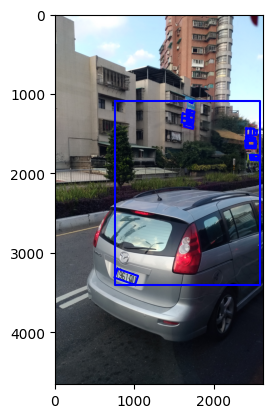

In [8]:
im = Image.open(YOUR_PLATE)

plt.imshow(im)

for text in response.text_annotations:
    print(text.description)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')

plt.show()

In [9]:
response = client.object_localization(image=image)

In [11]:
response

localized_object_annotations {
  mid: "/m/083wq"
  name: "Wheel"
  score: 0.93921423
  bounding_poly {
    normalized_vertices {
      x: 0.744018853
      y: 0.741939127
    }
    normalized_vertices {
      x: 0.877432406
      y: 0.741939127
    }
    normalized_vertices {
      x: 0.877432406
      y: 0.874899209
    }
    normalized_vertices {
      x: 0.744018853
      y: 0.874899209
    }
  }
}
localized_object_annotations {
  mid: "/m/0k4j"
  name: "Car"
  score: 0.871785522
  bounding_poly {
    normalized_vertices {
      x: 0.146253571
      y: 0.465593368
    }
    normalized_vertices {
      x: 0.991045952
      y: 0.465593368
    }
    normalized_vertices {
      x: 0.991045952
      y: 0.882648766
    }
    normalized_vertices {
      x: 0.146253571
      y: 0.882648766
    }
  }
}
localized_object_annotations {
  mid: "/m/01jfm_"
  name: "License plate"
  score: 0.839915872
  bounding_poly {
    normalized_vertices {
      x: 0.263381064
      y: 0.675850332
    }
    n

## License plate

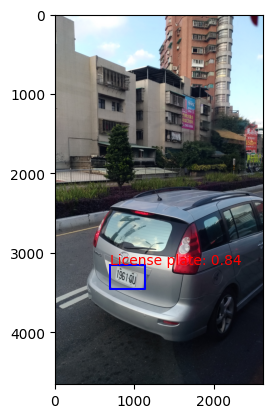

In [10]:
plt.imshow(im)

w, h = im.size
plates = []
for obj in response.localized_object_annotations:
    if obj.name == 'License plate':
        desc = f'{obj.name}: {obj.score:.2f}'
        a = [(v.x * w, v.y * h) for v in obj.bounding_poly.normalized_vertices]
        a.append(a[0])
        x, y = zip(*a)
        plates.append({'bound': [min(x), min(y), max(x), max(y)], 'coor': [x, y]})
        plt.plot(x, y, color='blue')
        plt.text(x[0], y[0], desc, color='red')

plt.show()

In [12]:
for plate in plates:
    p = im.crop(plates[0]['bound'])
    buf = io.BytesIO()
    p.save(buf, format='JPEG')
    pi = vision.Image(content=buf.getvalue())
    license = client.text_detection(image=pi)
    r = [text.description.strip() for text in license.text_annotations]
    plate['text'] = r
    print(r)

['No 1961', 'No', '1961']


## Car

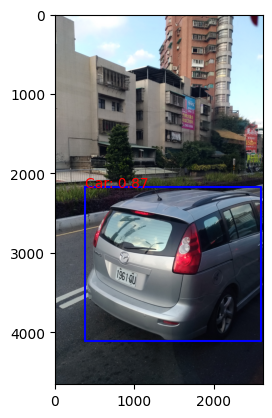

In [13]:
plt.imshow(im)

w, h = im.size
plates = []
for obj in response.localized_object_annotations:
    if obj.name == 'Car': #'License plate':
        desc = f'{obj.name}: {obj.score:.2f}'
        a = [(v.x * w, v.y * h) for v in obj.bounding_poly.normalized_vertices]
        a.append(a[0])
        x, y = zip(*a)
        plates.append({'bound': [min(x), min(y), max(x), max(y)], 'coor': [x, y]})
        plt.plot(x, y, color='blue')
        plt.text(x[0], y[0], desc, color='red')

plt.show()

In [14]:
for plate in plates:
    p = im.crop(plates[0]['bound'])
    buf = io.BytesIO()
    p.save(buf, format='JPEG')
    pi = vision.Image(content=buf.getvalue())
    car = client.text_detection(image=pi)
    r = [text.description.strip() for text in car.text_annotations]
    plate['text'] = r
    print(r)

['1961 QU', '1961', 'QU']


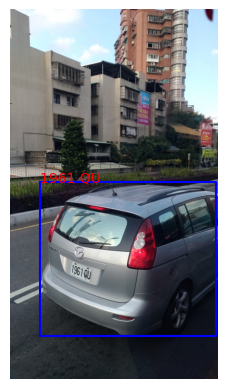

In [15]:
plt.imshow(im)

for plate in plates:
    desc = list(plate['text'])[0]
    plt.plot(plate['coor'][0], plate['coor'][1], color='blue')
    plt.text(x[0], y[0], desc, color='red')

plt.axis('off')
plt.show()

In [21]:
import base64
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part
import vertexai.preview.generative_models as generative_models

def generate():
  vertexai.init(project="astral-scout-412305", location="us-central1")
  model = GenerativeModel("gemini-pro-vision")
  responses = model.generate_content(
    [image1, """車牌"""],
    generation_config={
        "max_output_tokens": 2048,
        "temperature": 0.4,
        "top_p": 1,
        "top_k": 32
    },
    safety_settings={
          generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
          generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
          generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
          generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    },
    stream=True,
  )
  
  for response in responses:
    print(response.text, end="")

image1 = Part.from_data(data=base64.b64decode("""/9j/4VMsRXhpZgAATU0AKgAAAAgACwEQAAIAAAAMAAAAkgEAAAQAAAABAAAKPAEBAAQAAAABAAASMAEyAAIAAAAUAAAAngITAAMAAAABAAEAAIdpAAQAAAABAAAAxwEoAAMAAAABAAIAAIglAAQAAAABAAAsHgEaAAUAAAABAAAAsgEbAAUAAAABAAAAugEPAAIAAAAFAAAAwgAALQNBU1VTX1owMTdEQQAyMDIwOjAyOjE3IDE2OjM2OjE3AAAAAEgAAAABAAAASAAAAAFhc3VzAAAeknwABwAAKU4AAAI1iCcAAwAAAAEAMwAAiCIAAwAAAAEAAAAAgp0ABQAAAAEAACuDgpoABQAAAAEAACuLohcAAwAAAAEAAgAAohUABQAAAAEAACuTkpIAAgAAAAcAACubkpEAAgAAAAcAACuikpAAAgAAAAcAACupkgoABQAAAAEAACuwkgkAAwAAAAEAEAAAkgcAAwAAAAEAAgAApAYAAwAAAAEAAAAAoAUABAAAAAEAACwAkAQAAgAAABQAACu4kgQACgAAAAEAACvMoAMABAAAAAEAAABAkAMAAgAAABQAACvUpAMAAwAAAAEAAAAAkgMACgAAAAEAACvooAIABAAAAAEAAABApAIAAwAAAAEAAAAAkgIABQAAAAEAACvwkQEABwAAAAQBAgMAoAEAAwAAAAEAAQAAowEABwAAAAEBAAAAkgEACgAAAAEAACv4kAAABwAAAAQwMjIwoAAABwAAAAQwMTAwAAAAADxaZW5DaXJjbGVUYWc+WmVuVUksUGl4ZWxNYXN0ZXJDYW1lcmEsQXV0b01vZGU8L1plbkNpcmNsZVRhZz4BAAQAAABBMQAAAwD3KAAAeJztfAd8XcWV933Sq/f13t+7r/en14ukp6deLFmWZMkVF9mSC9gW2LIxJGRTdtmQJZuEL+xu2gaSbFhIwlJs040NJBB6CYEEAiRLSOg1IQ35+8/Mky2Tsrvft7u/3+4vj5k5c+fOnfmfM+ecOXN1jYgTcxzXleU4kciDmpgziyZFXxU91iTawnFbuF+eyBja+UelG5VPNE3LdKIm9DEWbCIdqAhZG+G4T6OiRD0osqF868SJEyDcO1KOu++ZwO1p0g0/h8iEsgNXj4NuJwMhz4C0iaL06ewbl77SzNVFz/xs8mwxtw49H7q/iauAbvyQmNILryeUzGLF1e1CM1cUzb/2ygoxtxLXR7TNXFNjLI5jY82/9qfGGhKtQ2/fyV/QI6AM+HzCqTaf34tLv+ALu4SQ2y/46c2Q1xP0+v0eHy6FiNMXdQa8fiHgIR2DXkEgfWKuZXT8P/0TMUH+idt//Fen47s9v/fzsp/AgPgDgWAoHAmHw6FQMBjALxgM4Rf0U/7++K/zffL5z/510fGBBqD8ACOwHwXVAAnQkWg0Fo8n4vFYNAomQqQlFovHYlFyB7VEIpHEL4VfOo108tf975B/43di8bf0+t96qOffP/5/+KdUqVSDoh1Y/3odufa+XP9vyLX31f/fsuhkri/Jf6i99gdy/bT8X8pvK5W2iJP8j83y/8T8X43VLXoY/l8NX1y6S0zpyEuMfvBnjE48zejuBxn95HWMnnkzo+8cYvSf/oHRiy9jdM2ljH7lo4xe+JeMXtLot//vGPV+mdG7v8BoukEvb7S/0JjvyHFG/+5+Rg2PM/rsjxjd/g6jexr0m88zGm7Qe19ktLPR/8nHGD2/cf+Cpxh98PuMyp5kVPowo9wjjF7RuH/Nc4x+oIHrnK8yOnkRo85zGH1zZYOPHkY/n2H0Iw5Gx+WMntug9ygY/YnA6G8b/W/paPDToM1lRg+lGP1SjdGVQUbblIxuNjEaNDL6uJPRqRKj360zun6C0WunGnLewOjw2YwO/QWjF32R0Ye+zuiyf2K07yZGS/c0xv8xoxvfZvR1aBuhY281+Hqhsf6/bfBvY/dNMUafyTDqblyro4wuRBhdVWDUmWf0QCujP+uQcL3Mhyiflvw5/9fnPiZt0RaVSLKFFzVPq2k+sUWJa5bFW9SihY0sv7dZLWpCP5LFyNxmJc0Lm1T0mmQJxhKhTUTbleiroJmOj7FIJv058jztr8CcKppJ+4lp5ZKxMD7pu0lFx1psl9I51DS/R+7jGZKbSfs0y+9twn30FTX6Ez4oL3hmAX0XaH/MAX5JPrFJg6yiuRnzkme4zSw3bWFZTPCgL8nvbUR9i5xmwlvTtIZmMs4CniFZDN4WMZ/YrO5v7I9/zv8deUBUwdHs3RNNsnsvevJoRdQl+uUJuYzjfoV6t+i1E29LR7684nZ4QdHrtH0Q9SHRG7Tejvqg6O0TYtnzCRvqfegvln3jqmW0/7u0DxvzLVoPor1f9GvMdWH5crTXRa+iP8dtRvuw6E3aJ4n6QAPDGxTDWyfek05Nheizv6Ltx9De2RgzStvfoXUd6r2NeZ+j8/6G1j+Oesdpz/7yhEh2z1+/SMd/44RU9oa+0uClSfbMKhPlhfHbSfn9Ba1zqPegz4+lKamH9mHzyum8S+tvnviV9BtXxSkvr594R3rpbQN0nFdOvCr919+eifoIZCWVmX/OZPsKeLxn63ba/iod5wwqk9dofYT2Ye1MVqw+uaTPGO3DZFig8y7tv3Scpev4Cq3voPMuXdOl67W0/sbJ8QdFL9P6POrLT5uX1TO0/jatM91Y2r50nNdO8rLsj861tP1Pj9lJ+7M6W1OmSz+na82eZevLxhTomL+PeWkfNu9SHVgq86WyXTrv0jH/GI9LdZKtSy9dl6X6vBTP0jVaOuZSXWXju+j4p9vR++1F3NDVU3bH9GFmiR6uofrz+/rA5GbF3By3PlPLbeDXZ2u5Uh40V8tXsqD5Wj5H2nO5WjaTI3fy2Vo+U6qWMqSObrRXvpYtZmhLAQ8USKVIx8uXatUKoeVatgpaqJFexRp5qlTLpDO5Yg4ZV+iAKnm0UsvmyUzVWrFUJpgy6FjO5ot0/myWPFbOZcpZMnAWwNL5cqVC0QNHIZeusgvMla5Wq9kqHYTNmS1RANkyI5UaZTZLr3J5CjnHMObYA7kS2CUD5ACwTHnMVWolCjRXpT3zmVq2VCKVCnmkLFJBxRbfhX2/aYuME5E3Z1tisUKc1sibADF9L6b25KgPz4p/3UxO8hLRIZSfUhyVcNxnaPl/aHkpLf+elv9Ay8/R8vO0/AItv0jLL9HyH2n5ZVpeRsvLafkVWn6Vll+j5T/R8uu0vIKW/0zLK2l5FS2/cbIULSm500qLqDkI7eUypa9f3HboH+rHv9r93St77/9W/yPXjPzw0NSLNww/e/PIv9624qU7x9/4zsp375v63YNrFh5av/DgxoUHtyzcNf3yFePfPBDfPqBym5B4u14bsSicOplJIzUoJWoF7zQp3WZDLqKLe+R6lUTLNyvlTTKpWKNUBVxyu0miU4tVaFSgvZmXk7tyqViN0E5MklSCzqcluayRZNJm+amk0GlM+VT99su6772q9wGCf+jJwyPP3Djy3C3Lnz869uq3Cf5f3rvqvYfWLjy8fuGBjQv3b1k4Nn7847a0x5nxm1wGk1uvdxv1aYvKq5UaNDKjUqKSy4xalcdibksDv8ygFivlYq0SqVnFq8OeBn41j0RY4CkLChmtILJqPoV/KSPyk1w0wIsVMo3Xlfqrc7q+c0XPvd/oe+jqgceuHfrBkeGnbxx+7ublLxwbe+3bE2/dM/nr+xn+MxYe3njigen3jg1+66DBZ/VWop60yxmzGD0mfYtV5dXJLTqZWQP8kKQ64LB0ZDRhlz7jV/ksvNci1qma1bzS51A4zVKDluBXIS3i5+kCqZXAjCUgJcCz9P6FkJ5kofWaSzrv+Er33Vf03Efxf+/6oR8cHv7RTSM/uXX058fHXr1r4u17Jn91H8X/KPBvWLj3jF/cZG2P6wJ2TzHoiNutIbPWolUKOoVDK9EpCX61AiNrI25jMa5LByz1hDbmUocdUB6JQQ3wvNsqM+skGiXA0yVYxK+QnaZFTJEIfsnv4ScL0SyXddzypc47v9p99z/33HdV3wPfGvjedYNPHF72o5uWQ/lfPE7lf/fkb+5fvfDI2oVHoP9nLNwzct/faaIuiV6ttOtNEYtMx4t5qKWkWSkTE81RSTUKTKQJuw3FuKEQM7fHdCmP0mfBIxKdSmbRK712lNQEFI0lUC7ih3pTjRI1N4vEYrYQp5ZAfjI1zKHjti93Hv9K111X9HwX+n91/6PXDH7/0LKnbhh57ubRF24fe/XOibfvnvrNA1T+sN+HBr/zueDaDpmFiJq3aQ0hk0QN65ORxEvFKplUx0u08maZVB1y6jMRc0fO0hY1t0UVdr1Er2oGYI2SqJDVAGNpqBApFUBFBA7ll4hhC6hwjIX3qdDp+DOfOa9y5SdLl13Y/Z1/7rjpC30PXj3w6L8M/fAI8I/85JYVLx0ff/3OyXdhvw+see+B1W/f0XrZ+dqgDeDhUjReg8ajF1PkwK+waSVKiVRP8culKsGuTQTsQ+2mQsBYCsltBD9MAPh5j01hN8lMWir8hhVgBbnmJoidOhkJdAPgT7GwFPxJW1bIHJ1pz3DRXk86utLOnhZnf0GYaHMOt0Z2rPCt60t9aGv8wPrS58/PXby7ft3FuQtnDQmPBpqgITPqQ2alXQPwTXKiPChFUrFUL5fpif4rPVZdOugY7VSH3dbeFl3a28zLIGpMLdVr5DYTNQEVET4xBL6hMxIxfBfzS01SMeVLirVoLMFp+AkLobUd8ZmeyIZabHM9trkjtb0nsr49MFmJT9cDU5XUmT3BVa3B1e0o3b0t3qG8IeGGtxerFZC/IWxWmNXNi8rfrJBI1DIIX2ZQQAGg4YZ81L6spmsJG/IB6A/RCuZb5DKF0yK3GCR0OZgjpSpEZI5u1CKIRmGhpQY1U6o/qELuvpbQqiowe4Zy4TWV7Fk9sQ1toTXV9PbOxNZa/ZMrk9u6CueOJrd1x9a3ewda1B6TAsqv4TGyLmASq8m+A9HhEgsB5BIdwS9WyGVmvbGctHTkTW0Z1GUWXRPFD2YBBvKXW43UBJRipaLBgpLsAszzoBu4ILbAkxYo0u9ZMcGvjzh0fqsp7lC5jaaYHfBMcacuaLVmPZaM29sTcVSD7s64sxYxtXgNMadUr5LpyaKTikFJPYZEolUy/LBfIn8j8MuA2ZCLGfJxW19V4bLaRltlNj3bkoAH/l/OTJjKv1khJ1wwL0RXoeF/qBXDLrjmxSVYdEHNDH/Yro86zWGrymMy+EgwoPUYbTmfPeOxpZ3Ois8cshpbBGPQqvVZtIIZHRRmrRRuELuqing8stxwQQpiBdAfqU4hM/KQP9QD9quJB+zDHeqY3zxY0eUjRJmlkmYiWx7yh6pL1MrGRoA9enEjaKaOdAn4k/glbOc6id8QsmkDVq1Lr/aa1HadymlQO/WWqM2adoEpU8KBUhd3a9xGrd+qESwyoxqcwgQQ6siMGlgBwIvh8OUYWQLJE/wG7AhyhcOsz4TlDotjpNNQTmsyEctgmRgpkSq8upS6IB1MgOLnifwXN+JFFiSscwO/WHzSipsbXMhMIStEqnPpIXa1Q6f3m3V+iyVm9w1ndIJRH7GbsCguI0ZTe83aoEPltSisOiSYAEqpTimm/p8otlwiNwGGTAYXqpJjkzKV4jKzwdrXau2typ1WudvapFjET/yMTm7SwRfBC0nUp+FfVKRG/EPsF671/fjJ/gvFUAsWaA50Q+czmWIOYLZnPZl9w4aEE8jNQTMUHvqpDdkshYC1FNT6LWrBrMRKec28XUflD0WSMvzE8xhUUq1C7XeaK0ml4DBUMtb+NnXEJzXqoS0yqUQplfBSiUIqhh5JFTKJUnFqCZTMEBTMlpnBQjhkayBe9JQKNVPVNQQshpTHFLJAcwxBi04wqew6W8aTPXdUH7ap/VZz0AJVF0kkCFq0cZ/GZ9fYDGqHUWXT4xFswWS3UsmY/5ebEPfwCoRAWoUm4jFXU/qWsC4TtfW3GctpuU6j0qqVcin8In5ywoiYJ3WxTK+WIrrQElsgiVYIC/JFFrAE4iUmQIJVEq86Uk53SXDnPO6C15P3eEqCp+wL9kTTG1s9Ra+36ndkPPqQHYGlKp001sqmTMLotxqDNr3HqQ3ZyV6sVbDgAfjFaimCN7lZJTXw6qDb3Jq2tKXhhWDC1t5WaItcxWtNWmPAbmnxWTWKpEamU0h5rIDbrHSZFDYDJkJSCjal2wIvQc8FxE5ZaHFK/o1gW+4teX1Vn68s+CsCK5ECVSFIE245WsO21rC5ENCXc+ZK1pKKWCIOU9hh8LuBXxO0IeBh8Q/12ER15WYlXBD0x9LWYu3IGgoJ21CHpbsMVy/TqExhV2RtR+GC1ZXu+Bk+nVctN/AyXcytjbo0QbtKsKp8VvdoxdadVfsdEq2KhHPMHbFY7nT5+1oDoa5woM2P5K8KoZo/Ug+E64FIhz/aGUxMZOzVADFwHKPMOrVg03rtWg98rFnjtkL/4YvkFi2BTVSIREGwaICXmXiVzwH9sdVz9oE2+3AnYlHgJ5GDWedtT+QPTnZsqPU71FGjEuzqom5N2KkO2tUBG3hJn7c6sXfKOVDAOQ66RLZjuq817FchZeBhJs6M25kXdF6TMQBIBlfZZ41YHQm7PWH3doRh0egpN2s1ARtv02OJlQ4DllXpMmrDDl3EZWjxk3BCo1iMP+VSPY4APJLSYzNh/21vsQ+2OZZ3wxwkWjXZtiwG3mXR+uzlpGsi4+oNm81qhbkU1qcEwkIALNhbLlif/8S21Lmr9XG3HL6OsoDgiuEnOw7MXE12bUfa5cp5bCmnOWKDL7VErLaYzRa12VtclrQLThKdoScADC7kJg0EjqGwCxjTXn3cq/bblU6jmIRzcoJfLVfYdAq7BvLnnRZTOWFpTTuGasCvcBh5r00VdGHbBX5NyKWLe3uvnG/90Ep3e9TaGjNk/FqsQsipjXtcw6XyZ3e3fm6P1meFRiEEApIm6qIb4MnBQQGvGxvLeVsDwd64uytpywqIEHy98eCKnNAXd7QGyBmHl5tyPlNWsFZC8Jkq7AIRFxbCmPIghMAWoPFbGX6JBsPK1X5sEHAmCsgZ51/I3zXa6Znqw1q71/VGDq4O7llhrMZxutElfWueunTdk3/bsncEAbApH9QlvVBUUzHsHinmL9rac/UHNG4zjEJh02MuGmgxtaH41QR/8uC24mfOT503U/zUucGVdVcp4CwFXSW/i6A1wqdhd/CPZj19cW9/0lr0mXMCkj7mtOQFBEsan9kQdyqsWpkJ53EZDl+agFVupvhNOms9a63nPJP97tG61Kz3zQ5HP7A2+9md1Sv2t1y0yZgPr3r806O3XhDb1mvvTJkKIaiQLiVY2uLeiWpsz4qeq8/XBuxKD3FNQNtM1Z6CP4lf0XnPoa77Dvc8cKT3kZt67r/eNz1uq7V4xuvBDUMwQDAL9Y6vK0VW5YMrMt6BpKsr6uyIONrDjtaQvRKwlf2mtFvl0kvIFiZBkKxPOBV2sMPDTAwtQRyBXeO91s4CNMe3bSR6/trMJTvyn90+/twlzoH8yvs/Mfgv+4PrapC/MR/UJwV9ymfrTAsrW/0b+zu+tFuX8AA/Vnlxz4KLkLNIiXIh77r3cPcDR3oevKH30Zv6H7+1/4nbBp64Zdmzx0b+9U5NTAB+8O7sjJHUEXW0R+xwp9WQrRyyFrEXBywFvyHhkujYGVymRBCYclP9xwFBaSrG7b0l90SfsRDXZcME/3lri58/q/v6A+P3XeBbWZ347sf7r9orjJWs7XFjNqBLePVpn3Mg551ojc1N5D+6VhNyAD98Gj3CS5qZCilOroK8+95DED5S32M393//toEfHF3+k9tX/vy2gUevww5IAtSEx9mZcHTEHDXgjxL8lZCtGraWQ6hYigEYAqI4eFGoqMpnMWW9BL+RLC42X9eyNmHNkD7us/bmAjtGowfXZD61rfzFM3MfnQitr089dHH3l8/0DBcs1SjsF/gN2aB3vOoZa81duCWypVsTdmBrY0ekk/q/qEUkxui+71Dvg4d7H76h73s3Q/iDTx2devXY1M+O1K79LJQf8W1gougbzTk74/a2CAGc95vzsAIfYiFUTBkvHBE5zmiVCDOUbpO56OOdOoJfgxBCcC+v+dcvc/jtwrq6f9tI5MDq9MenExesiu7sCW3omrz/otaLNwI/bNbQQuRvKkYC6+qukUrbF+bs9Tjkr3AYmPAX8Z8SPio99x/uf/hw3yM39H/vpoEnbx1++ubpd49N/fTQ+PM3IUJGeJ/YUvONZIxpjzHl1kXsOPwieNP4LUiI7uCRyBasV5HjjFGD6NRS8vMORJVyqYZH8OYZ7wxuGvE6DZ613d4NvaG9KxMfOaPy91sjs52JXcPLb/5Q7gMrce5O7FoWnu519mUtbQnf6ppnvL39C7sNLQL2Yvjt0/bck/arIm8d+x46PPDoof7Hbhj4/s2DT94y8sNDZ/7u+OqXjoy9eNxajSDsDE0VvcvSRMJqXm7WkIBZqZAb1ThFktdlSrlKIPqJmJP40qDN2hqUm1RUf+TYAoSpntDmYatOaRuqxPZP+GeHEn+xtnb5dtdwLvvB1ctvuiC+rd81kIufORTfMRhY2+Hoy/pW1QKbB7MXrMa5AwKBclK3/37nw94aQfgDjx0e+N6Ng0/cNPiDWyD/M9647YzXj6x6/fbQ5n5NwA7NcfeldBGnLurSx0jSoYy7UdEG7SSEiznBCHY0LAH0R590In4jRzAlNm69sLrPN9Wtsuih/9Hdw+5VtdjBycLF6/Upb/njm/qv3Ocbrzj7gbndvaLsHat4x1uh/Mn9qwLrakT5veZT0TIva6gN3bzYEgw+dsPg40eWPX7d0JM3DD19dPhHt6x4/tYdv7tj4y9uK16809ERt7VGSILBVsL29ijq9rYoEuzXUgrCCjQhG/EMvJSEoCSEwywyLIGYiEvhHut2L6sqPFZDKSJs7jN3tgR2DAln1BV2Y/WTM60XbYDnD5zRGdzcE9jYbe9ugfCh/MW/mTEXg4iFsHM1MbfJNJ9JngqfnnFk4z++cfTpQ8ufuGb4hzfAbQ4/d/uKnx5d/erRTe/eXrv8PEPCrfZZEL8Z0wJCUGzBNIVhs0qnXmGFn0F8iPOFuFkBFRU38xJ2kJQbKX5ebusu2joy6oTfUI5aBwreTf324bK1O43wOPvBNfGdw5ZqLLy1z7++Hts1bO1ICVPtUP7sh9cR5fEhclA1NGfRYOmbipPyV2x488Y1Lx5a8dS1y58+MvLj48t/eseKF46NvXRs9MlvOupxBDNQDJy/eIdBTQ7vRn3UgSOYLmxHhE8EDthIMjEBr5RQ/OIm8iKIvIJAwhZmLsXM9bR7si11/phjrE3Y0m8fyFrbE5n9U/nz1tjqScjfARVa0+EcKkJ5QrPLQhu7NBGnSrAwsdMXX0RbGsI/uQRqxex7t0z/8saJ565d8czhsReOrnnr+NjPj028dlf71z4CJQF4xGxwjIgKYJ54BAtqq4RxSY5d9IVJE5U8NTGS6KUEpzAIX4JTvN2kjXq8k1Vh82B075hrVd02lHcM5YSJ9viZw47uFuxWkH98brm9J4OwH8qDsNPElMdhOGWzNFogboT6ahJO0BB018KxHe8dnfrZ4bEfH1n54tHNvzq2+uUbJ167M7ZrAkpCX/Ko4cEMSTc8DB5ENAVbgOfEsYvE/ETtCWZWoYlYgcplIPLnyYtQxPD6Fr+wecC/Y3lwz5ilKy23GSIzg/5VNXM5GtrQCWkLE1VrLekerUJ5ojuG4faJ8uDcTXVesgievfcj4SJ9gQldmlu4c27hrnWvHp54/vDkS7dO/+b2NT+/ZsUz1zm7U9B8YEb8hhAI+xTZT+NumK29NYKADWKB8ivsOplFDdhilRSneNgC4UutULkN8D8Ev5Rs+mq3WR1yOSdq4b3jrvGysRDxr6nDVcJz9ly+M3/+mK0j6ejLQfiRHaOOnhYcZHjEbKpFyTOxU8kDv4Thp68c9yzccfbCt9e9fO3k89dPvXLr7G/vWPXjb9Wv+hiUHwcWOHyAxzkLmxf8v9pnNef88EJkF+AJfqwRWID+AzZG5l0GW9Wvj7uUTrKFkVfT9IWbMRcyBmxqh8FUCPJus3eizb28BMu1dSQQNiPgN5VjjsGie7w9ec4EsVy/DbsnZpRQVcd0SORdqE5Fj/YEPHuHvHvhzj0Ld25449DkC4dXvnjbujdvXfns1akDaxAt6EI2S9EPhIjQYLDoLDVojC0CjsO8DWcZsoUZW7ywEfh/Ohr2MouzI+wdzChsarIFwPToOxx9OqANu5zVsBBzeVKCe7hoq6dYwKONufVpv6O/4BqphmaG3csKJGZzmxlUKUVLKjoVaTm1Ckp2KNt34j6YwKZ3Dq16+YaJl46vfOm20Se+4e7POGoRK04BnVFr0W9vRagWRLSJ0lYlCY1IloJPH8Mp0g4G1V4TRsZ2gzOCsCxL8JswF32HA+YiHnK28pl1HrPPrtMY1Lqwk7REXEiO/pywpsu3tie2awXYgfBxZoTdSfUq9maV4EeIghbGFNp17B0Lf87CPbO/u3Hj21CeW8ZeuoOkF25t2d0fW1eMTOV8Q0lPT8zVGUHMT8P+kB34wUUZwbMfRxhDwmlIuowplyFux0KofWZLTgiMFeVWpdymlBoUTP5QfoTH5D1AyKYWcPBHEEUOhvRtgw3aJUx1RHaMwIS1UReJeSzsT7HkpVADLZRH3+CowRddiB3v3T797uGNb10H/OMvHx9//Z7xV+4KrmkHZkctZG8L4ajirGPDDWNFSMIRoA3Bc9BaJsE/7IKEdmkPwjm1x6gLWbEuvpGcwqri7SosAcEvkeDMi5M+ogssFjCrfTYENiqvlSTKBY69iPwdfRlbZ1ITdCiI6eEQpD3Fgpb8IYBEKQb1SfnDChAqbHr7+g2vXbPm5SMrXz46/uZ9Q49f4+pNkQNLPeroiKJ0dsWBHIEQPcjEG7F0FRtxEH7JjIg669MGrWq3QeuH/kcj69t5m4Z3qGSL8pdb9JZKFOavC9sW8Z8CTxKtu0cQSIds9QTvNOIRGVgwkrfE5PyuoyFuY1FUjCPgn/nVcYA/4+Wr17x4/dSrR1f+4qHWr/2lqy8FzCR1xl3dCSRHPebqSbC6qyuBs4y9nbAA8NiOUWqDNqVdhz3aWY/FNtd5u5Z3YiL6Xl0qEWuU1vYkeeXC9Mdna2D2noYfpxhzKSxMVmG/ZAnIX5PJKhAWmP5jCU6yAFvQqTa8c+vody4Zvv1v+g/9Vf3Kj3Vc++nQliFnd5LJmSTGCPADeU/y/fizPksxCKcK5PBIcLbOejy2uYO3a4Afp0j2XhEOylZv0cU9OiyT3wb8jSUQTkvaiMszWnSPFHHsVTiMcitlgeGn4KkKnbYiI3f/vb0z6ehOOXvSDlS6SHJ2JRrIqfwhfBJF96YQSLt7CQvkLFmLYiMm+AsBU9YH/PSNuh4BKvRH6dLzTo3cSv80TP6SLra0pQxpnzZg1QQW8VPMYIdZMa3b/WvajYWQsz/z/iVgtkDlz5aA4leXLpq1dyTs9QQBT1KCpgZ4lK7eJFMeT3+6gZ8uB1mCVvjYkJkcJHGoxBJYAAa8J7f1KF06lVevsCklCJDo331MxaipEFZ5zIgAyRL4bacJH/jBlN/u7MuYK5HA+hrBz5aA4TdrpUYNwWwk8cyiFahx9myAp5In4EklQZagiyp/L3QphtLdT+Xfw/DHifzJuSCCcBoqhCWAemvDTuheekev0q1XCXqYsFSnYH9A17cEjYWwEvhj9CUh8PusjUTxA7w64NAnBe9ExTWcR6DFO4xkCaw6ubmxCotLQHghfsmgcXSlnN1pojM9afdgFork6Kb6Q1QoRljoIRWInSUov6s76eiIURcUZviRIH99wq2LuZ1dqcR0B47AKkEH/OS9EH1pqQm7TYUQoEL+moADLJwCvwQ/UmhzN+5C/gj8KH6iReTt5aklaKgQqYg+zHGcUzzOPyGpGZ+RXaY+IPlb2ctSj5LUD6rk8tuUH5MutsnlH1MclN4qJZnUf624UvZt+ToJyaR+hfKg9Jv8rPhakc16sDkSIGOSsb8uj6u/yT9peFb/F8rNmitl14p6rC+IzQm7IaAKqHBgEGnoP43q5jTcm9xnJaTON9qW/pIiOfkYC/kNZI1oPfsUjn4cxj4DY5940XLx47VUnn29Rr9ay9Av1lIF+sHagR0ze1tThRaQs/fOtWbY12tZ+tlYNosK+2JtbNf0/La5vbvZJ2upYrqUKWars6lCkX23tn/f7Az7Zm3/nsV6qZZPF8r5ak7IpaulXLXEPmNLZdl3bNluQqvsmzXGwOJnbblaKdv4vi3T+L4t2fjCrVEpLVbK5NO7ZLHIvnJrNLJByVdu2WqykmHfALJ7+dypB/L5xUYmpzz7gC5fYqRMiFb0EYi5p2d5q8Bn0+VipiqkMulSOU9IplzJ84RWC0I2nc9lC6Q1lyuVeNKYz9G+xUwRd4vFUo7vmdy0enbn9h3zrUJGyFVRVCtCpVpGhRe2n7vkJvkvmykI1Ryp8SbRNNa5d2hy08DsfNeu7XPLp8+a3Ts6Nz8r8Fv3721tPBDNtOQz5VyMz+6b75/euas1E83E2D1++twtW+eFUrGYESYGuoWsUCxVhVImJ+TLZSGbL1YF3C6Wq9WkMLd/PpMU9k7P75zDoEV+267pfTswxszcbop0aALkwPQulOg6Mze3lzbv2zE9M3fuyul5XLH6BBkCV7tnp/cks5VCcvf0wWQFU+w767yx+dH9u5PFfDG5b356fmx++c49yRIkyJ89vXf3pu1zu2Zm92yant+0a3pLa76YA/KcUChk+G3TW+fn9p73H+oxu3tfaz5bFMqQaL5S4Gf2zy8254oVSKEo5PNFntfTfwNcKBgpnU4VRQWOmtf0vv37tk7vnt07Te2sutTQsksMjdkWSqXIgCc/LCPfubPfw9xrnMCpRM9hIR1dHNcvQeXDH6n7cPWnrv1/vv4fdx0REefs466tP3C/qtMHV81oPs/o5z/3v5GmRWtgNsL7NqzXuD+3/W9ve//vj7X9/8yhpoEPN3Sz4zIzfDS1sHu5mx1wsB++FxbG6DtxQh/mnvoBo9/YwOiH/5rRkXWM9o4z+ol/YfTSMqPS6xiVvMro3LmMXvByo3+jvaWd0U9/kdHDjflev5PRqzcz+sU3GA2/xegtYUY1qxjdt5zR0Wcb/b7N6FdmGP1MA6/rLEINdF9KFwQRgYUNadPMzr1CTcjw89N7t8/Oo1ooCakO7GY8v3PPzvlNW+f27yHN2Xy2Kmzbiy1MGOql17kMP3vw7E0798zMHkRDLl/ht87tOTCLcch9tulv2jM7OzM7Q6egT2+amd01fR69HuydQMhIqkmha+/WlXPb5oW+VbiOZpNCLimQSChXzhVj/MgI+pKOUWF65sy+VWzQVvJgqm8VaDqLbgLP757es396F0ItYdfc1rPoLKy25Tyhq59d756dnyU853hh5z4yfSrLC+Bkfufu2cWrA6wr+JnfO71vnl2dP4fwhXDG12rC9OymnCBEDyAYLFZiQq3GrwfGDbi/Pit8UMhsIFKciWbSuJ+rlGLCPtQzmRKCmGpM6GkMHC2iL4LlmDC5Y+/svnS0RBoqGcILJiHBdWOOMpsjU80WNgjZVsySzlSyuQKbBxIoVYr5fAWTlEqlTB7zkdixWioUs3k05oqFfC6H1hyESIBUsqVKDrCmhXx0T0w4F81ZOu96MNGKiDtHBp7YR2oUJR7KFgoxARGYUE4jNi3meBJ/l4V8JivkSjkhW0CcmhUqWWFDNop50tViFHErosrsYsYVbYboRvYfbMWqQdNSHXkaDZcK2VKpTA4IaM0gvs0VBBIS50okyt3QePBPD7tz5mA2V26MXiqcHD0Plov5EjlVFIUcAlZolpCtljAR5P8fQFyu/iHEVQyK2XL5qkBnLQvV6r9/zGrmD4yZQ7iZK5KMMXErXxEg6w1Y9n9bCnTYXKayZNgcjh6ZAk+MTpgagprO7eGn98/PkVXet3/79llo+eye6S27ZnliaVj1g+RWJl0sVLOVolAgAqzm+QEhuiu5L0atFBqRLcNQs+lKAaYKO11yM1+Edebz5RgfndtEjwKtUPRMjOfDIvI/t/lH0beanm0qNH++6UPcJLeOG+U6uTgct4Wzcy7Oww01fbtJ03xO89dEa7kit5r7DO7ncd/OmTknaK/o46J7RcqmvVwbF+GGcD/ClTgv50YPO8oruEPcT7m7uXYuhnEHuUu4IFdBtnMGjODl9nD7uM9xZ3DjXBatY9xfcgn0DGJkE/5zc5/mvsLdwh3gZrk6ArG13Je4fm4bV0P/IJ73cJdyl2POCeAe5cLcGu7rwPAMdyb3JHcB8IW4T4vEon3cEYy7jmtFny9ynaJHRV/l7gEuAVhnmt5o+jXqlwLJCMY+xG0VPSj6JPcz7mzwH+TOalI0d+PwOIkT/UpwdgPXLZoUfZ/7Ba7J859oOtG0X/RB7qPgysn5uS9wP+IWkJ8CPyEuyv2gSd18DUbeyAWANsTNcY9g7O8BZxjyiHInmq5t+hTmngdHK5G7ufO5v+KOcTsghxYuxT3TdH7T3dw1wP0h8L0VnK8Glr+BxPL4L825my4R3cEd5a6HpLZilDaU67jN3Kcg8TIw/ZR7ANL/Lncr92XuYu5CcHAON81tonJs5Tq4qugz2IrIu4EMeymQafwLNvYaINP4p2vpIjv15wvQxGK18U/YTl6w0xN540B8JKqZxvuBJa8y2GAldqPx/oCesdZX2b8AZJ2z9N+2ZUUyCot2aKLvSZTLOO7/AkDLsY8CAAQAAAARKQAAAAAAyAAAAGQAAAABAAAAPAAAAAAAAAAGNDgxODYxADQ4MTg2MQA0ODE4NjEAAAABlAAAAGQyMDIwOjAyOjE3IDE2OjM2OjE3AAAAAAAAAAAGMjAyMDowMjoxNyAxNjozNjoxNwAAAAAAAAAAZAAAAMgAAABkAAAXEgAAA+gAAgABAAIAAAAEUjk4AAACAAcAAAAEMDEwMAAAAAAACQABAAIAAAACTgAAAAACAAUAAAADAAAskAADAAIAAAACRQAAAAAEAAUAAAADAAAsqAAFAAUAAAABAAAswAAGAAUAAAABAAAsyAAHAAUAAAADAAAs0AAbAAIAAAAQAAAs6AAdAAIAAAALAAAs+AAAAAAAAAAZAAAAAQAAAAAAAAABAAH3pQAAJxAAAAB5AAAAAQAAABsAAAABAAGubAAAJxAAAADIAAAAZAAAjKAAAAPoAAAACAAAAAEAAAAjAAAAAQAAACQAAAABQVNDSUkAAABORVRXT1JLADIwMjA6MDI6MTcAAAICAQAEAAAAAQAALSECAgAEAAAAAQAAJgMAAAAA/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCADCAG0DASIAAhEBAxEB/8QAHQAAAQQDAQEAAAAAAAAAAAAABwQFBggAAgMJAf/EAEMQAAIBAwMCBAQEAQsBBwUAAAECAwQFEQYSIQAxBxMiQQgUUWEjMnGBQhUWJFKRobHB0eHwCRczYnKCkvEYJUNj0v/EABsBAAIDAQEBAAAAAAAAAAAAAAEDAgQFBgAH/8QALxEAAQQABQIDCAMBAQAAAAAAAQACAxEEEiExQRNRBRQiBnGBobHB0fAyYZFCkv/aAAwDAQACEQMRAD8AKGm/ETUfhtdXFluUkcAlbzaOU76eU7lzuQ8AnYAWGGxwCOrjeFmsZtaaKtV8mpoqWpqUYSpESV3K7ISM8gErnHOM4ycZ6o7f6SnoL5WU9JgUkFRJHCP/ANYYhf7gOrafD5XvN4U2tTTSQLDJOiu5UiUeazblwSQMsV9QByp4xgl0Vu9KrSua0ZijLFOHGHwD1nnQxrncoA6j3zjnIzj6dcZBMy8K2MZ7dP8AL2dSq3mxWgXW/wBVFMjKnqP1HUWliDZ6dKlGBIOQekTxZ+/WvABG2gsPESdR1pueID6dVQ8fILc2utQou6SRxAldPIhdIswoEi3bDgBcvsDceaW2nzAerdGLqmXxK6liqdV3+CmiX5OogEC1c7xx7qmMxbjTLjzHbbvV3/KAqBT+fOf4wc2GAvn7Fbfs4cuLJriv9IUWtVitEGmaaW3UkVIlZIsssaKqerYTjC8ZxjLck/XAGA/f9ZfzXuULw36Korop5QxgqpaAQBXZNxw5Zsph/SpHPckdFPwujpV8PLWlJGY6UTyEERlA5w+XCsSQC2SM5yCPr0Nbjea2gtlYt0DPIDiIyW9p9ynufw1UcZ7c/r1xsBp7tPnS+g4m3MYQSL7Cx8U/eHdfqXVmv7bW2Kqr6uSshZpZ2hWGWZ2DCQwTsd6K+SRKWWTDMQASALcWG1V1T4uWxrpdbjNJb4qohGrzUrJI0cSLHIWGWUL5jAnnI/NyQaS+H9Pe6/UdBFdFht1rk3zBLncfw5Yyh2xSoV2bclQUA/iOMEAi5vhrZaBPHirqGNDFWrZJBDRxOTJCnmwhmUNzszx7DPGOt/Am522QuR8Rblhdodud0QfFvw7i8TfDbUWl5GEQulHJAshH5HI9LfscHoW/Bn4U3zwk8GlsOo6U0l0S41Lum4MCu7Csp+hABH69WP8AJBA4PXNqcZzjPXYjLnz87LjTNJ0Dh/8AkkH4jRUvmB35+px0a/B/xwotGafjsl1oZ2po3d0qqdgxG5gcFDjjljkH9ugqTuycY56+bzGp557/AKdcS2YsNhdfJA2VuVyuPJ4zaQiipag3qMQ1EohSQwyBdxJA3Er6ex5OMd+3U7t2o47nQx1FLURVVM6ny5oHDow7cEcHnPXn9f7pUxaFnlpYlqJaStibymJ5UkAk4B7B8/tz0ONH/FfLo67yRSS1lhqI5ik01GxlgbYXGXTufyuQCrDHvz1YixXVHraq7sF0RUR/1en8kL1k/uXY4H36UJZ6WOB/mJHWfngdh/r1Xjwh+L613qKqa/11E8FLTFhcKGKSWUuuAUaGNWbeeTgKO2AvI6FXid/1VNF6YrZqS2aM1HcrrBKUnp7sI7airjhg34rc8cFF4P7dXxNn0aaCzhhjHZc2z8laXxVpqu3+HuqJbbVLDWra6pqadJfLMUgiba27+Eg4OfbqgLWuin0ZR1LSTVFVTUYijZ4hGkcUsikEx7iVd3glOSq+lUAJKthRV/8AU1jvFk1Ro7X2if6TJDVW2eu05OJFDFWjyIJgR+bnJc+2RxzCND/EPobV2m7pRVhvVNXSVFMKS2rVh2lyT5sgLuEeTJQBHxnYzKQ0r4o+I55GDLqtrwYMw73dQVZCLdqmqarTVFPWuJauWSSSWSFFjDtsf1BVAVSe+1QAOw4HQPtGnr5pvTd8i1BWXW/V9QknyskEwVKdiBtGTIDwc/w+/wBh0dqBFtWmaMSTR1C07TbpIW3xkASflIAyuBwccjHUB1p45aCrqGtqEsVPaNU3+UVFZVCesVAsUsYWUJJDtbzP6Qp2sANnJJOBzGGDjnr6WuxxrmNMV7H+67KOeCFkk014qWy7VZhWeF0dXplM8sEu0gxqAh2jaWGcdl54z1dLwnnpbt4sXCup0Mkj2p0MkFOVp0QVAAG5RtDMwfjIJ2E44OAH4d0txGtNLzzUM8zQ06x0EKxBVihKryQBuVchFIALcjIwD1YzwDuU1drDU1OtAYooYIVnnVwUDiSXy0H5T2MpPp+nI99/w9+aYOK5LxZrWRODarTY380Y1hOO2OlEVolqEDq0YB/rNg9KDT+ngc9aGJhxjPXTGQnYrim0D6gqKNLGOCgAH061ASSIkPjPsR0sVEk3bgCRjnpJJToqt3U9sg9ceu6pNGoI6ttJ3anpFDzytEyqzAK2JEJ5IPsPp+479VY1zp+pmrb1VT2+rpa6R5Hik4ePa+8SFm3AggOcdyeerLa4mqKPQWp5KKVoq2OikeCRPzLIFyuOO+cdVnoPFDX1PpeDUN0pKG/WedlJmqqURTAb9m0GLgerOCVPfp0LTRI7oPIuiu/hhXW6fxUjnpp1M7zyyKDwyl6piB6u34WOAM4OOOj9cvBDwe15q/8AlXV+pWl1LUKqmwC4xRA7V2pmNQJsHCnhhk/rjoaeCF9t+tbnW3ilsP8AJVYq+UZt6yLIhK8B8Ak5AyCP9kl830fxLQVXy08qNSQxu0arhT9SWxxx7ZP06c6zzSgPcpN4jfB/p/VWurjX6eutRZJqytkYxTJ8xD63PYblYcnPLH7D6CDxU+ETUmhLjVwWWti1NFGEcNGopZlJXcwCMxUgZ/rZP06uTaKw/wAo0sxP5nVyc/fPQc+KKstbXXz7LVw0erkEm42+dYq6YmKARq+wh2XC5CtkensR1Bk0mcNvRSdG3LdapN4FeId+r/CKqtGpqKup5rBJO4nql/GljlQuU8tUDek7yCxZiZCAQAB1BrHr3QbzyQUFxnt1ZJA6SSVNREzGMnmMzMx3A5JwGI5OcHjqVaQpNSXw6mtlZddxFRNbYWkpkSWVFeVMsVCjeAuFIUDLHcG4wIaL4ZK21O90bUX8n+RORTbUKyqwfYFL5G1txUcA8nHTn4IBnWdoHdj9kIse4P6AFka6i9NNj+lXI8FK+4waySWmq6eAyPiSvcvP5QLL6ygKlgcc4YY47jJFmPhpq626ah101fJS1kyyUY+epoHhao9Ehy4ZmORnHJ6pv8Pt4u8Otqelkrp6KSGSXdI9OivUIjFYg6FSAXHq9JUfQjIHV3Phgpqpl1PUVldJUzO9LEkLoiqiLEfUNoB9TtJnJP5eMDurCMEbyQEvxVzpIjZvZGY0+OMdaGnz7dOXldamIH261hIuQ6bgvPOldKamSJWZo0VVDSOXbA7ZZiST9ycnrJJw4bBz346aYKsGAZbuBwOubVauhBypwef36wiKXcJLe6ilS2V/zDqtI20TNIfTs3LuJ+2M9RJdK6WvuiZdMWuvp2szK0AShqlkaM7tzANknIOeDn6Yx0t1nOJtG6hVAxc0jsoAJJOM4AA57dU01BbBFU1FwrZtlKxmYCNsSE+aWGFbHYMM/r9RjqUZ0OqjIQBZVwfDvw6ovDailt9BPNUQOwdXqMFxj6kAZ/sHboX+IF4uFH8RFFQxOqUk1JG0noJYna3GfblR1AvB3xCq7prW0W4XOct5y7hHUzujKuPTgsAF4I53Z4GO5JA19qmCn8cqG0tTs1RU0sbiYY2gDf8A/wA9NBJuwlAhwFI92WaQx0LBgfQvcH/XoLfELVQyXpatKChvRNZHbKinqEaKRJXhDJiTtjG3OAc5IyCDgwULD5SgKsVTykJA79h79CrVk1i1P4o11qbTtzqrpRMsrVNJIu1SscDebsLjJXzYwAFY9+COls/n8E538U3+G7xWzSUs0VHNSS+fhqSsYyRRqYskK7KRwSCOMe/I56R3+53S9eGFzs1tt8Mr3Esdwm2PSolTHL+GNpEmdm3uuODk9LKKn+RlrqWGtqJGjmGaWuikhbDIm1SV2jAGcHaThznPGIRrqCtudho4UWCokhqKkzQeeFYgSL6ghADEEHnjG779XXPflawusXt2VmUYfy4cxoz7E1r7kmu91/mhqqjpKadAtBTKrxvKdsxCcZTOOAQABgekd8nJ78Gvixj8PrlNdqOtjjka3x00kDIGRFAgBdVPPJTG0c+/YHqrtPRxam1CLbDPHRVxVIk83JR2CjgNjvx746cKzwa1RZZBVU9KtyiVSdkBBbjH8J5Of/Dnt/agyMY4AuorMIfI002wvcTwy8VtN+JNitlVab1TXGaogDEIdrM4Hr9BwRghh2/hbGdpxOvJP9U9eKHgPatU0L1d9oLxJpK520tHTTSZpmckBZIt3pw21iTjLYBGM97/AHhH8S97n0jBSXSfRlVc6L8KWpvmrVo6mdSS0btTpTv5foZRyxLYzk9y0yAmhqleRcyETvFAn94Vbaqr+Xp2HpyE3Eg9um+rpoKyCWJ5Z88nMNRJEcZ+qsOoretVRWqy1AkimeWSJkUqruAx3YOWOfpxxzxzkdDjSHiff75Th6t4UZ/4hEqqBx3wSc/X/Lqq4ULKuNdmNBTrVlTLp7TF2rKV5pvk41rBFLOzFxE4kZdzbiMhSOq9+IXi/D4jaZttWtI9rrIap0EcOJRjau6TOVw6hgF9B/OcMCCDP/ErXldaaGttIqKWsNXCrTVBpp/wkbKmFW82NSGCknMbH1kB+BgGXizNSW6klioaSATrJMpSTlMg4G1ySMqpGMnja2eQCAKbZ5SpjwttI6z/AJra3tt7kZn8iQLLEu+M7QNpVjkHOAeDlc98jI6NV61PpHVmuf520t6gqDbKIeb8tSV7+UgZgWb+jhQMyAZb3I6ro9MAWeaOeVQrKvkcqMKzbuPYDaf05OBjJAoBoaro2qqiO+booQCUgWSM7sbiDgfl5/v6eyjokNJ4VkLX46aYq4KKKjuK1Q2om5XRSG2k42Mwf+HGduMsoB74heudSWqk19XXOl1VUWa771aWmnpiY0YxxA8leGxHHnDZ4wcjjoIXm6abh0xHT2H5qKVKtZJDXKI5nBRwMbSRjvye2R9uvl6v8V6aetnmmNfUKqyQyIoWJ1ULkMMf1exXtnJzz0MmR9ppkcW5UQ7z4xV1HO06XWmvlQ8gM1V8uEDELtRCBgAKqglu5wPqcxa96vq7svlzPCIDUyNsBEJjctuyQTnPJ+uMkdQSatdtgA5flWxn0k8DHPJ5x+nW09tu1YvmyW+uHk4ZvwXwinO0njj+Id+gct2TSRmedltd3q6K4GoMqqZGDhlfJU8c5/t5H26lth8ZNQ2auieGurpZIydoeqaSPkY/IwIPt7d/p002eXUFnppaSK2zyGdgpElC7F+Dkc9/fjHt0kpKFHuNwgr2gtdRTwyzlfICNI4/LGq+kjccdvbnHfJeWSDKaKkxz2G2lWU8IPE2PWNJcZr/AF0EdVBs8p5qfdIy5LNH+GBwQhOD9DyMk9J6zVk+n71dJaat/k+WpnxMiEq+VUAK4AHIyeMDAI6GXg1cVsNwvFfPVTwRzwmmEERZCHP4uduGDLsimGCrAluxyepxrLVtkqZoqhLVDN5zyO71Kywsz4XJ4QZyAD/kM857WiLEENaaP/kbfuy2X+IdfCtwzhqDdk+/8q06/DLpWtNSsOqKy4vFkSrT3UzBOf8AzEDnqH6L8FLFb7TSVFLKI3niR3VyGwSu7j3HcHjH26AlygsNayrV0dTc5IQCguNR5jL6c5ILEkEkYP0BGMY6bIZNPRTTM9hpnmaQ+p9+85znJ3ZblT9TyRnpXm2uCoB7AdArJT6B0elzu899vGhjAkygC/2+CSRPwkOFeSQfXnjv344FWviVuOmqm8W17DbNNW2GOF0LaYnpZYJ2DKRIyxYeNvbDj67eMk/auvooFE3yUI8resbRqXECbvU+O4A3EZwOWOd2Dhkn8U6qlXybdSW9ndgA7UwJJOeMknjIXA9hkc5PToXmU+kGvfovEiTQhDFAamdIIXMyspCxqrOcZJO0Y7E59vcftY3RGv7HbNLUdmqtEQSV8tKYnuJqMBDtO19piJJAC+ksTk5yOwD9Pfa+O4TVKJGZWmFRsmhRtr7idyBgQvJc8e7H6jp0pKutuC0scqzyTSOCsrTbnmJJAKqASRhGUlcjcO46uvjk0DBaWY+nqrAXLxK0zc4loZ9B216coY/6RWSvHjjgoI8e2QMe3Qn1BaqSuqKmKmsFqpS5Pk1aSzF1A5A2tKqKBgKPR2x2I60teitY3EGWOw1gXzFizVssCqWYngsRktwO3c9iT1Jk8BdcvWQOJbbRmSPasU0jSNGD7YRSCf055PUWw4o36Ql5ghXVaaEjGnhlpKXbteZgVVyo7lWPbHq45P26crhDcoK2OmF/kSk3Kwh3IzgDbnbsXgAqMdsYAHRaj+H2+VUO+o1FRUrIcM9JRMzL25XdIpPYdx0gv3w0317SHpNSR1SM+XjqaSWMBiOOQSBwOBk+/wBemjCTOrqAfvwRY9vKFM2m6equEtQblWSSeWS8hkAO0gqSVb9v+DpHJpe0woKwXKoZyRvnIBDjnJ75P+3OOpRcfh71dbTCKm/aep94zGrV5UnHtjZkH7dKf/puv9ogim1ZfF07BK2xHqqGrxIcE4DyRpH3xwXHcn26Jwco3d8kM7O6jkKWe1JFG1xrkKbWV45BH5jbSCGxu+pGRgjcf166td7LPSUtNLVmopaWMJAinydg9yfLC7mOBljknHUrtngvpiT8KKsumoa9d0n/ANu5hZRyQdkThD92cZ5xz1IKXS9jtzSfIaZsjRyYLJOslYUYcFd0m7B+oBx04xGqJK9bTsgJNr66TUohd/MIbco3n0jCggD/ANC/2f2NlZe62rbfNVAiUM5AbcMk85BPHK/5+/VrLP8AC9oC3FRcrjd66aAgOvnxQRSnHuAjOB2OA/H1Pfp5ptD+E2lZjJS6btrS4GTU+ZWFv/RK7gH9APboCGNhsABezdgqdi+VtSQJpXqd6tGu9dy4xjA/TOeP7D0+2fR93qZqKa60F5pLRO0gFTS29pmYrwwjRmRXOcbgG9IJPtjq29i1Cqy/yVo2xTo7yOy09opfKD72JPpjA49WMYx26lXgzpVtba4r9T10fzdvtLfKUC1EOYpJcfiSKGGGG4vgkBgAme5HTmZXHK1Sc8xROldsPqUMPD+X4Z7FSU8l1qquS8xllmi1BR1Mkg9WQHREMORjHbtwR3Jsxp3/ALM7k1HR2GqszyVw8ylp7fOm+TP9SNDnPBGMZGPbHSXxi0lW6mvdupqim09da+rjWWNK+l+dneIHBM29NsUYPHBJPOMkheozH8LenoqRq24SUdkiq5PLR9LVtTSLFUCTGI98rRk5BGDF3yPbpwe4AZaVaCfDOcRiswHcUa94JH1Cleq/Dyw6gtM9prGqZqWZl81EkKMSGDDLAAg5Ucg9+uV004N0Qad5gowFl49+3HP+HQ/uHwhT2WSoOi/EvV2nYqobqpJKgOszg5BcReSGwSe4PUK1zdvHPwOpbdcrtd7Hq+zgfJKKml2qp2nYZGjWORn4JDFmyR6ieAbjZBVuaqj3sc4iJ9jixX5+qLl0Js7w08FLUVVQ7K0YpKaRsEnAJl2hFwRzuYYHP36HVd4da81nVObleKPS9vkyfl6MmomHI4fBUN2znee/YZx0z6Q+LGjuUawaksc1nq1UD5mlk+YglfByQuA6A8YHq78njrjB4x3nXmqKKxWyWPTdPVS+UKyqCyynvjgekFhgBR7keodWW9MnQpMhma3MRQHKnVu0Zo7wrhM9dfa/zJY2Db600zTIrbmG2DY83LYw+8gPjsR0v01e6Koql/mfpajt0bQnbdamBaSN05COhCl5lyDnHIyucbgegx401Xh/ovS9bBFeqnUWty8chcz+cxwAD5jcqoUISBy4IQfl5Ebt/wASt3r7fa6eCj2VVvj8h7ipDSzQScbMnBXLCnJZWH/dEnOcCnPMWmo16EGRocR9lYPWdz1xbLBW3qDUdLS/IU5lmghoVaGQqc4RpCWLsMBRjG4gYPuGrl8Ql4utPSNT1cspVSZf5RFPMA5xu2KIhsGR2y3tzx1GKnxNttYJTWw1V7u1VGY5TLLvYKQMgPzgjDY2jsSDz0LbdfKK01FXTVFQI41cGIBEk4+5Kt7Y+nv1RJkcLJWhBJGxxttqystHQKahppqqtmeZWSWWXapUezJycn7Nx/f1rNVRJNUpT2+lp4J1AMYi37QPdGcsy/s393SfzlDkqv5hghz9+/v9uuTOxOMAYOBx0npt51VrOeE8WK5XG66ptNNDWSpdJsxUc5/FaAquVcbuwQkN9Rg456n+lPGGXwisMWhb3plqHWElQae21IcLbLkWZVikErMNuFZAV4/LyVLELAtDyRUepaWtkWQ1FNuMThiFBYEMGAIyMfryF47kWFoq7T2urQ1q1FRUtdRPndDWKGVTjG9W7ow3cOMEE8HPXmtyEkJuKlbiII8OBWWyT3JP4A+ac4dJXFTR2RLrTQX+4oam5V7tmWchRnyRwSgJCjAG1R9e5F07opaKkp40ZpWhi8pZqqQ7wo9i7fpnA47YHQHv3weW+51qfzSvcljqKuVhS0F12tFUsd0jCOUBpSkaBv4GPpbLEBipQj0f8QWkbZTWgzpq20RUypEtrqqJDHs4VXeriDMSBgY/9w6m6R2lLH8npuiXR6UWpovmoyGhwG3gZGD2Ofp1Vz44KtKa12LS0AHzM0huNSvryqAMkXPYhiZMjuDGO3ub7VqrX2h0hoNXeE0d9imheVae0UMlUsVSzA7vOTzY1H5v4FJJ3cHIIL8aNKa01pf7vq676LvVupRHujpzQzeXTQRphUDOABwMk+kFixwucCccxJJcoswjmyDn8qs1u8GLtd9FX3VIVILbQRS7Xfduk2LulKhQew9ztxsfk89A3XN/qvnqeoop6inhkUN6fQGZTgHjvwq9/p16LeMNy05oH4dKzTdsp0utzNvW2zLCBsp6tgxmqGbayks0TuNpz6VAC49HnsNONqmopaFqwoY5HmlmkUnCHYPSueSOeCRn69VWTdWX0G7X0ifw6bCeGPZioSyqIJFXRF1r/Z425UPdpJI/NkJVHGVLZ9fODjqT6EpLhqKCa1UUMsrSozbYVy5Cg557kD6ff9QZbZ/DmwWzy3qVe51CLy1S+2MMGzlUGOMYGGLDv+0oS/Q21PIg2U1KgJ8qH0Ipzn0qBgZyecDsOtIMI1cVwJo+loSW3+G0k0MSXatht1MzqZYYSHfYVySoX07geOc/XPHW0/h9oulKRbKisnVfxJpJNm/k4IQH08cdz26Z6/V5ZmSJyxPv26TW3W1ytrS+RI678ZCTyx/Xv5brnue+ft1O2BLDHDZGdZfMw2T34xjv1u6rLkxqSgOQfcfTnrdoGYjYoJY5GPfPbsfuOPrx1tbrZVXSs+VpKSarnkBZY6aIys2OTgLnsM/2dUjorQT3pywXGe3TXKnpmehilWJpuMltpYgfXjngfX6cWE8NbXZNW+EVY9TDDFfbVcFginph5c4ikBcM5HD+pXUFs4C4GOt9C2T5Xw4hoYIlgrKPMddTldzQy++4A/lwSQc9j36QUlsqbDXzTW2QL80V86kLEJORkjA4BYDfg9xknGDyHNJGigHU5SKlotZ6ZohbaURVVNTTKIUKIGxGQ29Y27AOw5+o3e4YzSx+Pt4tzJHcaHJDnYkimNsAkEk+5BwDhQM5PHbobXu7G9XG83ZLtU2LUNZb2o1gqo1+WwkE3lLHMu14vxZS2/O/DOA3MflyGatbTvh9cVqHqZlpKcwQzV9SlS8+ECCUyKTvEjZcFjuw/IU+lUube6a1xRnt/wAQFsrW2TJJCysQZAuUP3HuQf0H3A6jvxD+Oel6XwXuDS3GVGeppctGHVRsmWXEjDlUfy/KyeMyKDweqn27VMlJFGgldtgA3OxJP6k9Ka/WcjQH8Q9LdDYq1aw+IEMrJSLykGu9G0CddeIy11LXVNPVxslUPX5Upxz3AJJPv3JJyAf1C1ouyNVVk6oiuW8tUjyzoOSc+208c/8Ah9urBa0pLLc6W51tZp+3vVPKT83PSRs8w2Kd24jJ9RYc+4PVebnURwSmCBVigQnbHGMKuTzgDt0MLhm4c5rtdv7Qe1+I9oYxE9mUDi7+wXaqu84Zt7+UMflUhmz2xkcDGe4z2/fpHOZHVSx5zuJPJPGP2Hbgccds9IwytULLKWZE5VR7k/5/69N9z1FBTTiHLFsjcQPyn79aRd3Xz0hOUsyRFgy7m993YH/PpM07SOSWOQMcdsdJWmVx5jnaP162hWonjDxyQ00RJ2+a23d9x9uglq/FHpHSunrkaKsq6rXGoQNgtFiQmJWG4HzZv6oO0EggrzkEdn693GfS1qMN+vFFoSgYFlsWm1ElxlXDbC03OH/DUb8bW5BIzwELF4o3/SlkltNluTUNvlcuUjhjErE4BPmAb8/fORjA46hNyvdTWzSSzSyPLMWd3diWYkZOcn379/f79ILSUQjBZvFJrDquSt05UVdFCg2JFVuHdos8b+TuB475wffgHo3WLxJ0xrmFaesaHT10kTa3mYNFMcc8/wD4888HjHuSeqG1lylpKiGQEpPEdyPxlMj2H33EY/XPfp/0z4qQSSR01wcUk4CgTMfw5CT7/wBT278dz6Rx17NS8Wq/N303cbWubjRfMUZ9RkYF0IO7BWQcrlmX82eFAAHfqM12lrbcaaWnhqZrfHK+Gidj5MhCht5K+nAOQC+05XtyMivQHjtf9GrElBcW+UYBvlpCJIHU4OQpyOcD1Lzj36M9h8c9F6nhxqCwvbKooc1dmPpLbs/90x447nLH7fQZhzohRUAuHhTWRRJPSstRBIodJIyGVlIyCCOCCOoZqfTFxtlMWeB8A9wCerR0mitL6ukl/mvrK3SVNYwpzG870VVIoyVUflkbG44wMcnHUxp/CkWOKkrbvPLJVU53JG/CKwGMsQTv4yRuOMkEjcARIandRJpecutqG4WuxmKvjnpW2s5+ageJlDEsFK4yCAQORnjnqutxYmoY4yMn3469DPjA8ULdDZprbIIquZgfXKoZj+/XnZdLlH8y7YAye306nVJrDpaRVdZJEqJCrSVErCOJFGSWPA46a7np1qS0QVzzh3mnlj2jncEbHmA98FsjkZ461jjkvd7ighcI43FWJOMqpYjge+Mfr0uvl1g8pXjmqHq4jGi+ZyqhQPynvjIPGOP7uhoprpHDFaIhNcY2chQYqYnbuzyC/vjHOBgnOcgdM9XX1NynaZnMWTwqDaB+w4/bsOuZnluE5nqHLuxJ5Oe/fpbGile3Ur4UQKR0qp3hd1Em5SThl4B7c/4dI551IcmR/MCgqBggkkfm5z2JPv7Dr5X1EcOfXxnABYHA/wA//npunklkRyh2Oq/l2d/oBnPtzk/cewyslRSSuqF2bXA3ckYxnH+n/P1Y66ieRCxBVPYYwfr1IWozGZDISVGCSR+UZ/w5HTbWFnVSZNqBSckhc9j9P+fTpRTAm226pummZClvqZEiJLNC2HiY8ZO08ZOANwwfv1OrB46JGypcad6KQcGaBvMiPPcqfUox9N3Q/rV8xXBTIb8pds5+v6f79NclIDEzKMYHP0H79eQpWZtmuKDU9Myj5a8U7IWem85uB2DMqMrjBwRnAyBkEcHrJ4jrpe3UlNRXXVlAkZxPDQag8iKRecBY/JIU49zu6qtCZaWojljYxTIwKSIcFSPcEdj1Kq/xEudRRrHVRRVOwAeaykO33Jzj+7oijupBzmfxO6Xa81tcdQVbPWV1TWSH+KolaRj+pPv0P6mRcM8rlR9B3P8Ap19uF6mq5GYRiPP056aZEkmc7mLdOJ4Cg0Hlb2rzJapIVqUpfOIR5ZCQACRnP+P+/T3qq401zubw0DM1DHLJIhIxncePYdlA7++fbpijoHkYDsOnCGlSNQFGPv0AFIrWNAvYddtvA6+7Nvt0oVRtA5yOmAIIo09E0wLybSVJ5JGQfpj375/4Ot5JI4FLALI2dy9yPpx+x/u+nXJ5X24dgFJJ7DBPt/z/AOOksszgZde3G4jOOkKAWtaktSu4Bkjx+Vvfv/v0haZXCQsylFxwoycZODz9v8OvoqQUMgkIjjBzuGMZ79z0jmqVLEoVcnllBwQMYyehSKyoKqw3nJHII9ukTxb2JVlYt+UscD9/p+vXSbzI4vxHVB3IHI/f/nv1880eSDnzW7k44H0I69SNpukQNIodfbJ+gPW1RRh4nX6ju3t0r2KfUvf+qo/s6UCPEYwCc92+nQpC1EzSbcDHb3PXxYApxj7dunurpwk5AHpPP6dI5IwreznuPv02kQUlEe1eB+vWYK9xg4zz10Iyvq49u3WFPUfSAPp3HU6RWm0ZBP8AafbrCeet2HsoJz7kc9KIojGuGUZ79Bzsqm1toiIxaGIkkk8kk/frWONJq8JIqunk1TbWGRkQuQf2IBHWdZ0s7pI2TEzs075JO1RjJ7d/9B1xqAAGOOQrEfY5HWdZ0Qgm+pJ81Rngrkj69cyxWPcCQQcZHWdZ1BFKY1GzOBnjn/3dKoGJiHJ/N/l1nWdEIBIbmT8yBnjB/wAR0gfmIE8neBz/AOXrOs6cERuuC87f+e/WrE+WpzySees6zqSkFvT8yqDz0tQZHWdZ1WfurMey/9n/2wCEAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAgBAQEBAgICBAICBAgFBAUICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICP/AABEIEjAKPAMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP6C/wBsl/AVv8NLdvD2rX+o6yAHvL62VisbMPuYORketfkTceG5ILzU7zTtbg1aCQCUpKgJVgBkKRj1/wA9K/ZD9q3xPonhv4G60tr8PLO4tGIea4YMgUHdkDr0AP4Zr8b7hILmCX/hGtRsltWAMSoQSgxzkZ9hivLylt6s9Go7XaMOfUrLebC/kWyuZCRBGzgNKQCeBnkdaZp1m9i9zIHSSF2ZgCclc9efwzT7vUoYLom8t3miwQJQvEXGMkg5FSIhldpNPvIZ4S2Q2dynrkZz64r2rprU5ZOxnbUvpb6JZpLS6KFkDtgHqMgZ56VQu4dSsbdYo7SW/iQbZJIipx9BnBHTv0qzf2tlqMtzpuspqGk3jwYS5hcAoe2PX2plpbX1irNBqV5MHIEjOxbIAx8o7E96IqyM+a61MfQ9MvIvFGm+P/Cfia90bxrpk3mWKpEjxg5IdXVvXGPbr6Gv3r/ZM/4Km6NrXh5fCn7TKw+AfEInFraanCmYbw5wcjgKoPGRxzX4XQXlhHfwhC2n3O4oqPJ88jck4HcfnWwJtRkmns9W0qz1XTXUEKyhlTPXIJ69K0iruzMpvSx/Yt8P/if4T+IVrrF54U1Wz1O1gGVkikVlYYJzkHpxXcPeGRU2hJ8DLBGBGcdiTX8q37LX7T/j79nC/vdJ8FSaVrng+6uVWfS72UrJGn8So+fu8niv29+EX7cvwo8eXMmhWF+dK8TuPnsLuRUih7kLKzDdj1/nXTBa3OKpe+h93PJw7FcIqksAee/XmnCTzlMhO1GGRkFSv15rIsdYtb3RRq9jNHdxA7bh45VKJ36j6in2GsafqccpsL2C4uFBYwhssMA8kZrY5276s2ZMDBDqmehLE7vwzUYCAksjg5ySG69feqsc4fy2y0bMCGVm6HJ4AzVkYOMq55wSp4bg0NNbj5nuL3cAsrEgjJIB68dailZl3jyy2cLw2AnU8/nUib1BMjoXBJBzyRz70+5CqNynG4ngnr196RLempXLbFO4kKy4zngHn396FcqG35RVJGM8EnPNRyMR8qOFHILE8Drz1p5XG1nR5R1wp5BGeTzWkI9TKUr7CzgSRbXY7Q5YktjAyeP1pkh4dihkGDlQevU8DNWZCAD5u1gBwAevWoGYOriNTtXIODyPpWi8zKT6orq/mLvAkRsbiG4x7EZqMruLOzSRc8EvwevGM4qwYlZMFnZcAgZxng96efLXOGCLkkgnvVR30MTNdsx7/wB3Id2cKT8vXk881HNh23xbHVQUHbnJx3qy0kyxysAk7AZVlx79aZIBG5ZVCEuSV3DHfnrW6dncxk7u6M+SUKkxZ380KSQGOARnpVaQozN/rFwCck5zjPB5rRnZRGzNgxFiSASdw5/XNY0qt/rdsZUkgsCcqOfeuumcc22hH3EzADeASMMcbRknrUJ+eQqjSxysMAFsjkHtmnzFgcZ3gZ3KPTnnOaqvJuDBJAqKSHLk/LjPfNdMXdtnHPcvxoCskQJXCgMwY8kZ46+9SyShYw8zRxZO1fmByeRg88VmC7DBQrIIyCQAfbqDmpld4yX24jYuTlj8xweau3UksDEf7s/PE33WU4xnPB56ciopGKFiySNJg4Kv8o689eKarNvR3cxTMNxBP3Sc8AfhUhyvnbGRnAwcsRk889elAm0tyHzyCyRXER5ySwyWJz71XkmVy8Z+9ggkHheDz1ptykxA2Mucqfl4yMnjBPtVaR5TMyZZEDbsqOG6nk596uFrmFSd1YsTHh+hyCpweQcH396a02FzIrJjJZgw4/I1DK4RmEu6WQhh8rYwMng81RmdixkiYmcggAsSD16c1vF21PNrSRPdSDb8pTJJPLZznPQZ+tZjocs/BAySCASevvV+dtyqSfunGcjvn396l+zyzPHFChkcud7BgAg5wMVsqiWxyV4OUrGUI8IFkZUwcgluuc9Rn3q9b27hZwpWWQBiiKeRweTzXZRaXayZRxFLIV+VM/MvueelbFjo22ZQyCQdC+ByOff1rzsVj4qNj0cFlc5NaaHO2mg3t+JpE3gsm352I3HJ7dutehaVps1rHEsx8wqOWJ5Jzk8Vr20KQxhU57E+tWK+UxeKcnc+9y7AqmrIKKKK8xu+rPeSsrBRRRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAAQDwRkehoxj6dMelFFANX0ZRvfLVCXcru+XgdKxdrAsVc7QRtJPRcen51vSrJk7EXJOSx6AVluEZ3SNsOp5G3730rspyvocU1rcyZk3MGV8MMlTn1qtiJ2aQrGZA2GbHQ+36VozLj7m3aepY1AFYFVG7BXO7k49q7IVDknTIXi2uxjKfMcsSM5+nNIE8uRXG4q2eRjANW/LIA3MvBwADgkU8pvwA3ykZzit1US2M+QzZ4t3L+VgrtCk/XOKnXAUEsqgnCkHj+dSlQ6MzFcA8ZXgGnCJQHWJtuCDypOfXFP2vmNQs7kZYDBJ6nH1PtTMYLASKRknAPOc9OtT7dshkVQUIyCR1P0ocbv3h4yCrdjmp50WQLHhT85Z8sSFOA3Xj27VMSjLGH+ViOBk8/U1LHuLZALEDkA4z7mrEUG9j8y8DJUH3+tYyq32KjG5WSMhlKMwIHAz7VKoCiRpMkFSwcN09j79avRw7AxCAu2cA9vTNTiIK21iSDyAR0rCdQ1iraGbHG6xN94g5IDEbiKj8slWYEIpOBvIwBk9a2miIVtp5Ixk9qqMqO6uzI0ZbA6nJ9KzU+5VmZiqYwqCQggZJH1/lSsgJGZvMQnAJPT1rVaMEk7wAOozUUaL8wf93g7QTwByapTS1QiksCEmUzMWY4BUng+mKueSJo9rvu2nBI9R+PvVjYqsSpCEElhjlhTY/mjDRgIGOCAevUVMp9gHMWKsyHquAQRz/nNRSKu2eVSzsUwygjjr2/GrHAXJEigAqFzwee9ARJVb7yjcQ2DjPsaybtqzSMe5NuIQ92yBycd//r1LhSAQ2UJxkGmjCjHpycmlTltpRiuPvVzmqV3YUbgGWNTnGQxOc04KxO44x1IIpwXbwGY45wafQbkRyr8Z2nqQOlDEFhkA4OQc9al/zioSu1lGAQxwPb/OKCZ7CfXI7jio3QuAA7Jzk471KdwwHJPOAaYe+emO1XDc557FC4MbIyucAHDYP3apSykl13KzEY+U845q3cjMm8IynbtPPTryBVV8FQTIrAnAYj2PB/Wuym7K5xz3IndfnUFgytgkn6/40hO75lfAY5GDnI596RVZWRsmQKM/Kx5OTzT3cCMlTwSSRnrnPFdSdnc5QOHJwxLEEDjr1qHIKkMd2Rg4PXr7+9HIBB+vBqNnXLLlg5GM4PHX/wCvW5jKVwbYqmMEBmGMFjUL/Kdw3Eqd2S3GcEf1pitsEhllDRFsK2evtRIDltmSwTAJY88mt0rKxzSlfVmfe5ZZAFOSMMxHB68Dnjqaw7hohMXdirBcYJ7Z61rXDnMiyPlQCcAdRzzmsOUSKcs6lQcFiOnXr7dK9GkcNVXVirOT5LA70J6ENgdzyM1QmZ/MYRyRKUJVjkcHJ75rRlDvCUjHcjJ6Hk9OfeqEuBu2kOcn5gRyOevNepRl1PMqxtqQuQXJ8wbsHaAeo71nFCI5R5j7VO4LnGOvH86vSDIbBCvtwCDyOvWs+53bTLJsCoQWG7oOeo716FM4Z3Q1ZVR5I1SVigAYk5PfvmmSjYWLs0gZiQobGeOB/OgvG6MXbZEQRySN3XvmoXcKjI4kIJwrBxk8E8c13R30OSbbWpnXs4IkjeUHJwCG6H39qyXO12xJIuGAJ35HQ5HXpWxcI8jzeWrK5Qcnv196yL3fG43rLnbuDISAfrXfSPNqNleWSSWZNjAKAQEHG/g9Dn2FOlaZVUkAjHPPTPYc/Wq+4CTavGThCGz+PWpmZUZkwxYLn73Tr711wfRnG9yHeoLJCd4LEZJOTyfeo2Rf42wu0ooIzjr15qZyucsTuHI68dfekDFZR5ZQkKQQ5HzcH3rVO2qIk7IjkQNG3DHccEE9OvQZ4owyoclVfGOTnI5561KSCRzgtnBJ6jnoPzqvKHw4YtvIxjccHryOa1hsc83pqU7gklQ204O5sngDBqiWKjcoIY/dDHLAZ5zz7VoXO1gQX2DOS2cY4PeqyjaFaNwhcDh+S30966IbHLOXQoygPMzRSOyYJLFuB14FWI0YwxCN0D9t3cc0eXvkJZZQjDaoLfd4PTmlDLGkaedkEYDHucHmulbGbdtWNnBIKkFnAAIzjfwcmooywUiIxt0CAHOPWpy+Yo23jpjOPvDnj+VVWeLeQhRNind6rn0pkc4rBvMdU2CYOSMZAI9/zqzvPB3Ri52kBT/CT14zRE7bMsrsD0ZiOmDyearl90ahNkZPOW4L+5oF7QjeNclhKgAOCD0B54HPFVHA2q0YBJOWYEggc9a1PKjOMpIzFiQQcgHnrz7VFgjhhsc8sDjLe/X2rRT7kuTZWYl4goaMhiVUMO/ofypsKNh/nQRA4Kg4IPsfWpxcFgwVo2+UYYD69ai5miAjaLk4A5446fWtCW7asjkMmJ1eNlyxAbjA+tSF14wzEKCTg9Pr+tRP5bEqoJIJAUOeD9fwqFSgleRnCxDgIXyV9j60AnfVDnYHyyzBgG3AqcevWmzgsMo0QOcgkdB9amYJsLiVZTwqoCOfypro8kbr5TrkgFgelWpbXAbGp3xlmEfl7lIJ4YdqjYx+YmPkYtklD355NTKXhLeaFVOikn7xp0y42kqmMbQM9eT2pxkkrMTV1YopEWEscsqyXDD5iOw56CpiPJ+621AME56VMEkCtymQSSQfu+2KXzIsiOORAwJwzfxetVzozna5mzoZzsOSG5Tt+Ofz60sseEUSnbGAdxJGc9v61fCuNxCptJOAT0/ziq0sYdZFfBQHLEEnB9B+lNNPYghVPKIbbLKVG07j2J65qVN/llpNq/MQPlxkZPvUoSQquGLIOgB5P1NIsmBvwWjyeAOnvTAhMm5SELo4JAJOVI+nr1puwCKTBEgLknc3I9qWXIjwDuwu4bVIA9zUzGOMgCSEBjktg4HuaDJpNaFBmXzXLOqAkqgYcn6E1KYXHls5bacryPve9TNBEzo0qDzkHy5OcjPWmvHC7K5d0RXO0sTg+veq52QV5Y5WTZAwD5zlxkDmnbSvmEszMqhSFH64/GpyF8tmGFRnwdwPBx2o8mRDJ8gK9MZByfXPpxTU31AasZVZCqqzEZAxgE0gkAOOMqo3Efd+lJv2oFV9pDEbVP3/AF5pJggwQHTdySMEMfc1Ld9WaRdlcFtgzGVW2hiWPqSahbIKLy7KCNw7H0xUkUpDGMrINvQluvrmlL+aJDEQhUkE7c8/StU+rZoRFSw2BQoIII9PpSQoNojEhZVODjkk+hPapWj3fLuLSL82V4zUMayR795+8egGNtUnfVENtMVpYxIUVsOo2jA6Z/8A1UNubG47yB0wPmNSEYVQUXexySR09CaaOAoPL4+YigyIwuICoJYnIOAOPr+VWN6NJtbzUccgk8cen51GihwSAjYBVip6e1SuAckKwI6n1oAjLDIBDHBwSoGOTxmopSc8N5eGAIIzkZ9KcCr9DlchiMYx/nFS7zjc6KQDxg/zoAgEMXztudlByxxnnHanoixBv9a8bEHjhh9TRkv8qMyjOPlGPwoDbgWV1ZR1IPP5UFLZjWics23YqEcEDP4n3pjWuSNvnowcEEng+45qcMsQ+SJmJOTg1KWjZT8zlQ3B3HIOehoNIq3QFZolYvI1xkkAKBhahHL7S6nJIxjr7VIzTkOSY1OOAQeOPWqy+Y77A5DAEkheCaCZrTQEjfzN/wAm44DAD06Yp8h+Uko7hmycckf/AFuKdEVThgCwXG4Dr7YphSMFSzSjIyWOcLg0BTI2gmcLvVUwDyDyefSp1MPk7AeQTuGeRmopisqEOpMfAUKxy/uBTzKTHDKQTIFwAoAzx0PvQdeHV5Hyh+1daXkn/CvrU3MBCN57Ruoj8qMZ+6R94/WvgbxHc3V3LLFGptlU4Vm5JP8AnFfdP7Zc0Eml+Er+5XyHhZWdZGIUkyEKFPYHI/Ovg25Z2kMkkg/eAZy3C/Sv5n8S1zY9tH9peF0X/ZkUjzTXzcWVlLcRRW1wy/NIbhgqAA9fc+3vXhmu+LJTod9qkNnHa6fbRs07I4VFwfU8n8M15Z+3B+0zpHwM8BR2V9d2N7qktzIBBbsfNjfaCozg5zk9sCvwE8aftRfFb4t2motca7N4O8P3k5hRYXBlkiHygjgYzj0r83q5J7eWuiP1qhjFF6bn7m3P7UXwl0KBm8SeMdB0fTVgeNgSVdpRj5c4x261+bvjn9unXNU8a3+k+CPh9p+paEoLQaldH/X542tlD7EEHtXxZ4Q+EGp+Mf8ARdU0SXVNGtIwbCS4Vm+1yHlnxj73avsH4d/sg+LfElwp1iae0mu4RHb2dupjitVHcPgYbGOegx+NcWMjhsLHl5tT6DCYKdW0mfPXjD4m634i1G9vdVsbWA7EaSG3iwo4A4wuD0x0rV8KeB/GfjZR/Yuh3VnvULHLdRMit74xkCv07+Fv7Gdh4bsrXTrPR5JpAWZ5p8TtLubnkgZ/WvuPwl8BodGsUultYdRELbo7OWBVDcAE54446Zr5Wtmzk3yo+hp0FFWsfi94Q/Y58feIJNPhPiO/sJ1lIeWGEIZlJ6EsuBgDqcV9v2n7IFjoM2nXOqavrepPawDzVZspMduSjAdRz1GM1+qGi+D9LW3mn1DT4ZNQljUcKFEJAAAAXAyAMU3xPor/ANisVXzAkRVVYAkDP3cVxTx85u7Z0027WPkW3MmjaFothc290kAXMSmMlUPHGfxP51FHqsDs7Th7ba2wktjcPUevetnUb5LlE017yeeaIsxRhtEJY42j/Paufl07MDxKi+YcspOWzz16e9c8JNmbVtGUtc1PRri7tpItRnns4UBCFhgPjk8dec1XS4hmEYWZQQBkjHOe1RXmgRTRykQRqSCCAhHzHHIqRLFECL5aqwO5iCeD9PzrQwbvoi14ckg/4SOyt3miRQ+4AkKAMd6/lw/aj0nU9U/at+JV/IkZMtqoaNVPlONwOVPrlTwK/pm1vSbu/t7safHKt8sZZDH944HUY+hr8gPGXw1t2+IviK4kspNZuCiLJMw6MSflBHQD0r63hrG/V63tDxc4wrq03A/NC38Na/KLZjZtmRtobGAoxnuM9hz0qDSBrcnn21zod7Y30TMDEULB1zw6NjocH86/U2x+CsF1tllskXI4UDjrx1/+vXbw/s1Wk9pcXlzJbaZMsPmRmRSWk54CqBz37V9ZX4rhdprU+Go8G1ebmTPygsY7yCQvJbXdvOCG2vHtPXucdaDqa6oix4Z4o5ChzkbD+IHrX6T6z8AkhSGWIqbYMVBVf9YQMk4x7ivO9X/Z4sLqN7u40pJrdQASEJGPdR16moo8X0rJtHfHhavFWPjKz8ULo0o80QvcKNoSQ/eUjr+n511MPxu8ZW9lHYaT4X8ItErl457j/W5OMjO0+nXrX0dP+zMrwtO2mRfZQflYqSUb6/jXlGpfs2+INNvmuF8RSXcDKXS3jhT9z83GOASfxr0YZ9QqatmiyrFQ0gjtPDv7YfxK0hYUsfhX8JL/AE6FM3PnMzzkcD5cpjPAOK77TP28r+1eS3f4NeH4pCoYOtruwP8AYY9z+dfPR+Dmp2ktytrFLDcOwaUrAct2HPTtXMy+AvGaNdPHpDDTkyI3d8OxB/u4xjr3JNefWpYSrLmk9zupU8fH7J912v8AwUD8N6lH4MmvfhYmlXUtwYJ7dEePO0c7sn5Rx1zg/gRXT+Lf27/h7Zf2Os/gLVNN+1zlVeN5H+z46+YOw5GMZr83Z/B2vX9o/wBlElpcBd0crqG/JcVCvh/xPf6zp/g3T9E1PV9auQsQkdcJHkfe3Yx26e1edXw+Egm1I3pyxbdpI/YvQf2tvhbY6Jp09xc6XFLMxVmnl5CkjDKOM9favUtB+NHw81vUPsGka5Be3qkTYjUlSp7kjIr5x8F/8EwfFXib4eaN4n+JeoWHheGQZitjKm+4TaGG3Knk+hA/ka+9/gt8FPhX8GfCH2HRvBun3vipo2jN5dLvKrkYHYMep54BNfC5m6Tf7vY+gw/Nb3jrfD12dXkmsUQqVjVwx4BB5r0az8Py6fEga5Bk87eW2/I2f4QPTiuX8I6TcWurTXsyxpGQAABkD8BXqfkmZIXbMBU5AyOuPSvn5vXQ9OG5YsNNm1S2vIEAzGhdjIQqgDtk9aoQrPau6lDDJGMk5HlgE9BW9b2i3Vjqs1vdoJYo1cwEkGTkAqp9ec1Y+zwSlHSXeCoDIQfkxWZsQWkrStIBE6IpBDMRhvpWJrtq7JMGmUK6EhZGABwO1aC31vp1z5JZjGxyQSML+NY/j3UNPudOjvYLuygjijAcK4VycBcgdepppX0RE5dDwaC1uJrlmuEt1dWwSq5z2/CtO50uRJxBC8FwHGQQxIHcg/54pt9ZajoMKyarDIHZfN3EhgFJ4OR+FczbalJcX9zO13DbqEzHknJ+graKtoZ36EGpxGEqcDBXG4np7UixMywAq7TMoUKT941YvJILiLdKF4AYhjjH4043Fpd29tJbvMLo7lLY4UdsfrTI50cNqkMt7qHlM0RtymxSE5DA9c/nXYaJYmy027LzNKjjYFLcrz0ArEtopbG78u7Vpiyny2IPzAmtd5FlHls4SMHPQ8e2aCIt3NJUbykWMMCMjGfvHFc7fQTyy7FO1mOGLDoPpWnqDiTT2lhuHSRG3L5ZwRgd65TTLy4upnIV5lDAFmHUZ5NNJvY0Uk9Ebl3AYbR1coSsWRjnd9PeqyIYbOKSQu7t80iBc7fl7fpVq8lkhUyqpdQMkY9PQ1HFM32eO7kdLfeoLggjAx2/OtIxtqyHPXQ5vUNRngMZhtZLsMwRow2GGec16NYaSuooqOfs+AJGMpwFwAOfbmuIk0uHULl/LuJtoZWVo2wQfp2rpI51sLeSHyZmdlCAljjGe/tVmbdtWVxAtujsSjLvIyBgEZxVd7RZ5dwaQupDYVsA/WrEF6TGd0Xllx5ZV1BwOuR+VVbWOf7a0p1BPsp+8hT7gxxgj61rGPVESlbQ1nuHtbdgrDeykAEcHHP4dKqWySsoVpra3JYFDggIPU0y6mXa6RuJ+duQeOnc/hTosLCDvLNnHToM9K0SvojJvqy5qMsFlPse7tnyqqroflPGTiqhuotQsVeGO4dXBUYypBHr04rBKX086xGSIRljksD8gx1H+FdAqmzhZJ5kkRhhzGTgn0rZKysRzov2LyASebGyKrFULdGHH/16GureN0jeSMOWJGQRUUeVT947NGRkgDoMdKrJ+9u2KxnKLhTgEHPoPwr0qMklpsYVFzXSO98PW0eoW99qKXkKrasA6s2Djodo9a/Wn9j/AOOPwT+FnwOt/Cms6lZadoonV0uJJF3ySc5QMR8pyx/GvxufVRa2txFPHB5DL8yKnJAx7Vham1jqNnb2l7M66Yg3RW6naiH+9gfj+dfe8KcWPAVVNrQ/NOM+DKWbUvZTdrdT+mDRP2g/gd4nntrLwx8QtCNwIC8kM0mXTnjO3qR+X1r0jT/FvhSaOWeLxRodxsQMZIps49ivY1/J5pGq+H/DV+97oen6vDq5KqZLIsrRjrvyD3x+NelW39uyzy65onjvx/YXLxkCMX7YYnnJU9+n4V+zYLxZorWSPwvH/R7pyV6cz+o211ZNWtrfULQRzpK3BWRSAMn5jjp0NaLWl5CzbIRLBnKEJywz6da/lz8J/ET4z6Pqspvvi3qr6JLh2geNTIGH91z0HsOK9Zm/am+PWj3og0TxXp+soXWSOe7Vh5QHbahGf0r6eh4q4SWjZ8Vi/o94mMr02f0iZ1BoTHDpc73qgnayH5F9elVjMyhGlgCbgGCgcnBz1/z0r8DND/4KIftI29rqw1eLRNQuomBsxbMycZ6MCMcYHQj8K+jdD/4KE+Lo9Ds7nxb4eu9Ru5EQAWtrvWLJGRlcfrXsUPEbBTVlJHz+L8EMxp35Vc/W+SaOeGMEkBW3Y98fpUQkhZVkik3LGVViy/KK/L+8/wCClvhDw7ffZvE3gbWo4WhSR5Y7CRkgJH8TAEfgM13V1/wUP+Al/omnRW2o3Wk3kkQmjmlLJHICcZk3KMd+9epR4xwc1ZTR85ifCrM6b1g7H6Fidf3UrpIuYiUBI+cev6VcUGZEkWUNAV4JHJNfIXh/9rj4E3UFhM3jzSwl4iCKNpFb52GOG4zz6Zr1DTfjV8JLy5ht4fiPoKvuETI4ZQHPTnHHXvXqUs+w81eMj57EcFY+lJqVNntZdVE0LROiEDDA/eyOelVBvO/jaWOQAOn41xcPijR7sXVtpWveH9QMWZpNl2oyqnkjOMiugs5ZLzTv7bsJoL+znOYnhbcQO4x1yK6I5pTlqmeXUyPEU/iiy8ZnAWEN5anoQOW9sGtTR7ia2vxJbTxJcrbS7iUz8uw5AHqRWOnnXC3Vxb2txPFE4jd1Q4DEdPaksb+7trm8aO0na4js5nMQiJMuEOFHHBPT8a4sbj1KFkzbB4WcZpJOx/KF+2Hr3g/4JfGf46fE3xZNdXNpdy+bBZxJtM7qVTYAOTksOnf8a/Nz9nvwbqfxk+Jv/C2/E+la34W8KQvjTLWAASTI3DNKCM8hvUjB74zX2L+2b+zl+0P8Xv2kfGXjD4reA9b8N/By51tprVb6MbEj8tBiMdCGKA8EdTXZ2Gg6f4TFtp+kyRxwQoi7YjhOgGR+Qr+bvETHxc3BvVn9ueEuB5cFGpJaHod9JZeZA1mL7ygqlvMYsS2BnJ/CuZvtAF88UBf7VFNhshxlAexParn9oRRRqzoXYnqozt+lc9q0C6zY3NkJ7mxWVCodMgpx1yOnUV+Jwh71z9znWvHlPGdW0GK1uL64sNYg1JWkKeXI4zGQepHpyK5641u7tIo4rmytZZUYqZIONwJA6e3611fw7+B3w50u81VdU8Y6pBrNxxc3U4aQyLngqOOhJ7dPWsDVfgfqeixtYaT8R7nxReTTsLUTRLtjjyNobgc8+te7g8XyxszwcXg1OOpJp2s6TcMLaa/itbojfFDtGZs9QD+FdUZhM8bS7YpEUAqV+YjjFeNap8CvjVYX4Sez0iOAjJv0xug6EKR93nPrg1zzeO/HvhPUY49VsI/EFtarg3cSZ3kHoY8HPHueP09qjj4W3PgMxyuopuy0PXvHPjDTvAXhrXPFF49jeRwWrDyGyS/AyAo6n0FfJn7Nmh65461O4+Levo+gadeTSR2dmiHlQQFZunJCjkj39qo6xbeL/jl8VdI8N/8ACN6/4X+GUpSW4vZ4mVJHDA7clf8AV8fX8q+4LPwodA0rSbbTrdYtMX91EFz82MDOMcZ4r2KOLhJWbPmMXllaKvKOh2mi3HkapBqUsSSWsagBFJDN0zlvzz618sfHvW5PDUBlghW9M9zHGqkH5VdwNwBHJGc19GaRfpHJLbtbmfylBdQpww9jXzT8dLt5YYZbaOEuLpAkUjAq5JG1ST2BweK7aDTd0fMYyg3uj3n4QvMNG06JraSWfyI1yhO2I4A3H24ryH4vfGS+s9bb4QeAPD+l+LvF1/IFZpot6wknGEbtn69KxPG/xa1b4U+CtE8OeGby21H4s6/HHZx2kILLArhcD6n6gjjpya/Sn/gnR/wTy0zw5p1n8a/jO5vvEWoTLcG2uSGYnIfIJAOc/TNceMxUad23qevl+GaikesfsKfsBatovhvSPiL8TLmNNXklVntGLQQWUTBdwEQxuYnPPpX7daHpml2MrWPhNhqFnEgUzEnbEMDJB9R71hQwyXkUbXVnFZaHGAlraKeY14yD6jGOtei6TYWMNhB/Z8EOlWSqGCKu3I7g+/NfM1qrlK7PSnG2iJLCxWyvFuHR724YguyAgHp0Fem6ZaybYxqLR6aFcNsUfMwOOprjNPbEscVrGZA43ByOB7mvTNJt9Ehn/tC4OoX+tMqR7FXdGFz0x+dZyV1ZHDW3PStMu7OO3gXTI5bmHaFDsRyM46+vFegeHI47yGOTXNXh0XTzIrSnONq++a85uoruVFitrq10WzEikgrk8nt6V6T4L/4RRdXtri8jl8TylTbqsO5o04zlsDgjHt1rKMbnDKXc9ombQGtImsdPv/E5dliSVCcRKRw49uua6Pw9aeI4LSJTZ6ZZWqvhQ7N5gTpkgD2qaJteux9n0qws9JtRHsaRgOnbauOv1rZs1e2JN7rKzbQAELoARgZJ/Ku+jG6I5rbmxcRyPFxdPbkYyyquPxyDXm2leLPBt1e3FjP4wsNT1ppXAhjmG8hTjCov0Nd9JqVl5W7cJ0Iz8ql9w9q8+f7LpeupqunfDpZ5riL5buGJQ6jOTuGOM57V0SjpZj5luX59YRG1N7fwprl5GkRcERqpm9duf61wA1zxHcWYks/h5fCFGZ/MupRtKHscZ5Fdpd+IPHqyxz2+gWNrakkiKZyWZcdSeMHnoK8Oz8VlsNZ1C48aabpOmxtNOlqAC7gcbBjPp0P51DpN6szlsjjfHtx41lSyaPwxDNpquFAYlkiHXMZxnjNeY3sXiaYWkV7pttBL1hbyivBxgHPXpWprOpapPpdxrU/jy2g0t4izKk2HtCByduODxXlWqT6Y8VnLd/FaCe4cK6K8v31A6Hjr/nitI0GncIxvuY3iKz1u0ee1vEs2KtyETBB9DivJpre/iK7ooUjcZUhc456fqK6nxQ+lwie9uvHOmREhQq+eCHz3AA69K5q3aO88p01iwkgRxG4WYOzA91A7eprWKtqjeMb6I4rVLm8ivWtZNLacEZjCniQYxj+deY6w7XEbPfWkmnMjHK7txA9iK9K1qx11pZ7qy1qzuUhY+WzkKIiTwo6Z715Lr9/d2cE9xcWj3PlsBOVP3SemMjvivQpK+45RsjnJpI54W+zTNGQMqzHOfbFZMy3CkENHK7LuAA4T2P1xT7fVra4mSO5s1sA5O1mOd6/3jVKeWJRM1rcRuykqr46iulWRlJ2RUkhhdWT/AFEqjDMWJGfpXIT7IyzSNuUAl2AwAB3robi4U5W4QHA3Mw7CuflkScubdxcRMDvUjoPY9q3grmU6ulkYF5brc25XzJBE65V0IGBX0J+w/wDCj+yfil41+KMV3OxudOEQtoXIkdiioXkX0AQdB0J9a8JtwuFKY8sHLqx4619nfscwwP4r8YajpVjJp0ot2i+dyftP7rBbHrgkfhX6Twn7rufnvF9ROnZn3hEhHlrw8WAScdPpVzARgRg4wSce9QxwkLGxKgYztyc5qbAJQEYUnJwOtfo8LtH4+42dxHGC21C5BzjPXkdKgdJJzJC0ZUBshj0YDFWWZBiTDoxOMY+9/nioczliQvnRbssQBx6AVq4aaFxdg8uEvuVJ1crgKzngD0/Opyy7AGQkAZIBBK+9RKGZ5UbLKRlQOq/T86lRnDyhS65AAJUEEelPkRslbRFacLKwKg7VG5mwPlGODUAw0iqiI/yfMHUe2OfWrDQiOSVnwAAAGPOee/507yCURGPzYw7BeDVpW0QX6E6sRuicmIkAgZ+6PrUUkuGCqrFcbQQenHemMjMryu/GBtB6Ads0SMv+juUHIwdg46UJW0QEOFCbV+8uCFz1FPzIrZXYvHYYb8TUQQOCCxKngZXBWovsmIUE2CSMMVJUjjGc/lQBOr5CpEhaPPLIQfzp6q8yFSDGRkkDqFzwR6UyNXeSF43SNkbnaCAwxVolFyVkVSD82e/tQJytuMCgANEzvkcqDwfzpNjhlVlLjOQFPWpNoLKoZS7DBwOBSDG7l8c4CgfrmgiMtbIinjdEDrHK8ZPGF+4cetOBKGJJIow20OATk/XFPYq27l12joD1+lUgG83yykm0AFZA3X6mgu6vYmjEoVlG9QTuIJHJ9KjkUsyFSmCckEZ9PSrKMgU4bJJyQR04/wDrU/7HlkXAEZGBycn2FAyBSjIzkt0GBnge9Y2o7lw3meVEAQS/c10aRSw79uHDkKDjlR/nFZF4sdxGEMsN9ESQxUHA56HPfpWM9zRT7nmGrEP5jB0+Yckn7ox1r508XH7Qt3aBvs0W3DSuudxyCAO+DX0rrNtsmlCx5RhjBHH0ArwLxjA81td74xG6kKqhcH/e/lXDK+p7OCnd2Pzc+NWl3F7HrFx5qJH5e12P8L8AEfhivxK+NNheRXuoNcGPfChSGZSR5uR1I/zjNfut8a9J12SK70lXtDYNGZ3dRmUtxg/TBNfjD8f9EkLK9wjb0YspG7DdhnFeTXiktT9i4FqWqps/ID4qyxSWlxG0w2cRrhic/d6nr2r4s8R+d9qM1vufcuAD065z09jX2P8AF2CGx1gWMzTAXAZ0aNDtQ43YYjpjP4kV8p+ILaIboEALMMk7c5OByRX5pxHBNto/trJavPhorscBukMUsomIAOMbQMf54qpmSGMF5PlAUqQQT2/+t+VWrwqgVZCrSEghgnJHpWcitIHVtzg8hAvAGa/PaytdM9bnT0C3eSFuAGyeWCHkY/WrLFnZY0UiJQoIGTnp1469KPs00R3YLKRkjspwO/bpTY59jLEzbXJ4APb3NZ02kzKSsrM1tOiYswB8ts4BRRyOOue/Nb0XnO8aBuC3JDYA+oxXL22+GZZN7yqBkEjhOnP+e1X4rzfC7/PG4I4Y42njvXt4LGezkpIy9hGSsz6d8B+Pb/QdX0Ro9P0q7tIiJJGm5MxXkI6Y+Yc+1fdPw7+NNvutLS407SIFuJdzyxpta1UNkbAB3z09K/J3TtWm2q6ySKyYdUIAIwRwD1HSu00jxhewt9mnvLmyBXYtzbkCSI56r0HGcV+o5BncKloS3PhuJOG5VlzRP6IfAPxc06zuLSVI7W3cIBG0keRImMbvmBGT7+lfob8J/jBPNp9ut+1vcIkXEaoqIoxjK4785r+ZD4IeOr++hga71G5nKt9kZ5lGyfYceao9Wzz24/Gv16+DPjKUyaeLmVJQgVgysMN0OMev/wBev05QTgmj+WuM8hqUJPnR+4nhLxZdXKW00CCTTlK4U4HlKcck49zX1J4f1i3NvGFyGcgQgDI69+Of0r82fhZ4kE2+0upflkG4MoHzLxx7kZH5196/D25cWypHBK9vEqCJ3XJXjv8AlWlCNo2R/PWc0rSPqjTpi8cKEuz4XPHJrtbBmkUMxEmXJyQPkx6/rXmGmM89lDGivlwBIQcMc4yQe3WvT7GHyo0CyEgAAZ7cdTXbZbnz1+hp+WArkDbu4yTx9aawmIx5Gzf8pcng47j9amUbQCAecck9fXFROYhgbWYEYODx9Pr0ropp7GE9yrdec9un2ZFkfH3sYwM+lWEYqCBHIxJySBxT4rdZgVEUscS4C7mzyMe1WrdPMiDJlOSCpHIPvXQcurd2eIftoa/eTfAsXs+ijSvDVshW7juBmad8OeFHXOfpX4tywW95A9/bRx6VcPCowhZFU84yoIz1FftR+2lD4mu/2c/FPiHXNShubW0hK21vtwZThjkj8K/FnUbqwntbO6vUaErCjMWJUox5wa/hvKHdH91VtieJL+z8xkeCTT2XcodMuZckkhienIpQYHeb/So451G/yweQDnkj86Zb+bIJHSYzW7EMUIBAxxkVXc2LPML6VrQGMg7Xw3fA6jgnNe/FvZHFMoavJNe26WeqJ9pjU4EiEpgc4BIOeMVntbJaRSJpkgjcriMPIWUH1PPJq5qtzNbrIsUAnVULBSRl+vAyfb9aoxz2motFLHfRaTEybWjuFPytjsAT6+9aJ9GZhLfaXdTWEWu6YLJ4WKteCTAckE7s54HB+tbk8mpx2cF3oYt72BpQjkzD505yFJPXpWZHfS2kqLd6fc6hAPkEkbDBH4n/ACal03SnaU/2JJc7HZ2S3di+GJJ9R61SdncmXYk1VNIuEnbVIJNM1AKI4mV/Lkjbn5gwPGRnoaj0Jte8OJb6fdXkt9pvmC8huFuCLoMGyoLDsPqKtarPAsZjvoJHjk+QuXGIycjGOvQGuMuLLUNM8RLqnhfW7nUYcDfZzEFADx8vuABXXCdjmlG+x94/Br9t/wCMvw41t7W28VPqehOGt/7Iv5FVWB+8+P4sDPWv0c/Y+/bA8D6v458QSfEPVZPCniK7mWO1jJDxXyBSAVOThRkelfgRea1Z6otxaajY/wBl3abg6sxBOP4gc8HnsRUMmjeL4bTSpvCXiq50W5t3YQzKwklKkcgsT+HrXQnHc55wP7XbTUraXzJfPsPs+fMSSO4V0OeysCeea2FmJRvJOd3O4nI/zzX8onwS/wCCifxV/Z/tG8N+I/Dl/wDEfTIFEhbULgr523qy4Prx7jt6fsf+z9/wUw+Dnx3vPCGji5s/B3jC/si7aRN8q25BO4lyRyPTnitDJq2jP0ybcpLsAQCRkE/L/nmoZAWZNz7tudwGeeuM8+/41R0y8g1GKG60/VdO1qylyVuLeVXU8HsDWlJJvB8pkZwSCB/FSUUtUYOT2IHB82IryGJDAH2PPX6VaJRFfy0AI4BUjj/OKjGxeEZQ5ySy9DyfelO1luANqhlJ3bvu+9MylLS6KxAxuVQwY5YtwSfWlTbt2vvwHzn+91o3JszncgGQwbrwelRwyv5ZxLFI3IwDx1OMc0Gbd9WOkcFtqMqrySSeo56c0rTAp8uxQQNrsenXtmkeVF2LvG4AoBxz+tMQqGMagSqoyCCOOTgVSi9yJStohWYukih9oA+Yg9+ecZpT5ucZUDGCcdefr9KWR8SBcLyPmPccHjH4U9iSpI3FiMhT29q2MX5GNdRFnkXzAzbeMEgDr2zWdHE75PmKGIycNwOD2z7VsySM6EqzRqGOWJ65zwOetUJIEeQzOdmCyls9OD7+9dUXZnLJXRmueCN+TjBBOM8ntmq0iKWDSvgDOFDHDHJ68+1aZUu0vA2g4Oc8jnoc1nsArYACgk7vn6Hn3rpjK25zyV0QZIYh+eTuIxjHOB161b7qgwCACVZskdec5qpIx2lmkVMZyAfvAk9Oa04m2orSb5CTnI7dTzzWnMtzEjmjR1curyLnbtViDnknJzVKSUSOpeVQhRtuQQF68Hmtmb5UHluEO7OQOD1/OqDxNKzkkIhGwAjnv05pc6IcOxnMzNIoAcTsSquc4PU8c/WniB0YKwkChsbicke5OenatRUMZ8t3PTcACcHrnFTW0IYedh0RiVIdicDnHf6UOa6GU6aOdvYJUkMiKcldpCNwOWOcE+4qkqtKTsZSQCSAuCBz05613UlsjBVLZDjCEE8deTzUqWIAUkgPvIHJHr2z14pOvbQ5nQu7dDi5bHzFiHks3zA4yMjGcDGa27eKSNwEMcd0U3bGGc8k+o9a6HygjFWcKAOCT65qc2wypkV2JbGVzk9feuSvi9NDpoYO8tS7pH7ziTDSjjKrgfhXSRQlAdwXJ4yO1VdPiES7QCABgcf1rSrwMRXbd2fZ4PDRikhFUKMD1zS0UV50pXPZhFJXCiiipNAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBrKHVlPQjBFQyRhzGVxtByTn2qxRVKTRjOKKJgUb02/JjJBJOf881nPA0S4BLJnOW7D061v1QnRpc5O0AZOOciuiM+xhOCsZOwAqFDhScMuP1pxjYMxU4I+8uTz16VfML54LBySQ3p+FOMLIjcguRkEDqfWtVV0MPZmI9uj/JIAynCjjn6nmrCxFcrv+VV4XP3varbxKFIwHkAyc8YPvSMkfmoojcu2QGU9PWn7XzDkKrJmX5cbtuDg9Pao/KXcG3nzSMDJOM/1q7sMZLpLuVchhjJJz0JqVkkB2tjD8EBeF96HV7ByFOKMmZlVdjhOMH371o8DaHcLngA/eJ9/ao0iWMM8aMoBIIIJLD2qycHB2Z4znIyPasZVLGsIOwzar5jkK5xyoPUVZCkrtAIK9yetMCAZwCCevvVnHrz2OR1rH2htGNiOSJXR15GRjI7Ux16ZGPYHrVijGetEZ9yrMpSReapUBdxUj5h7etNCEEhyC2Mc9+varpUHBHBB6iqpCRElVkYliCSSdvviq50S0nuMcBVULuIznJbp9SajVQxD7SwU4AU9/cfjSgpcWzPsLKc/KWPY+v4VNDEyZG4sCcgHt7UnNW0BJLYR1dg0bAEEcEHr7GhIgoXlgwJYgE4Jp8MOHZ2YscbQCTwM9/zqxsGMZOR0NZFqLeqIgQMEjPPI9KlGCowMDHFMMeTlWYfhUg59evQ0GkY2F/M0E4BJ6Dk0U1iQrEZzjjFBQjsVUsBkjtmmBmBQEhgTkEmpvfGCaiES5OfmUkkA9jQJq6sIxKtvGWU8Ng9KgbjncA54AJ7fSl8wq6qoJUnjjFJMqMNxX7wwwI5Ix+lXDc5prS5Um3Nv2ldwHAJIx171UAVkkBkjJUbsA9/rmrkoPzZbgDOPT3qAjB3kgDGBk9OvBrrhscct9SPyxzuQqAMZDcGoj0UhU6cLnr1/wDrVMsamWV2dnzgAbuFxnrz71K5+UnG0Ekc9T16V0xd1dnKZjMQrPzwT0I55NRNsdV+UkHnJOeefyqxJhiWRiQODjHHU9fzqJ8Hb8uARkENXQndXOciZsFgWCIP4iR+VQtIFaT58jcBgnHarLcgjpjrzVO5diXYCNmDbjtGN3B4xnrXSc0ttTPuGiZtplMhA3Abvr15rOIk3ONuXJwRu7c9Bn3q9Nk7lRXRtu5SP4uvv71BwdjkbGBJADdOvBwa7qUrHJUKE8ZR5BGUDcMykHoc8is1lbLbUidQDgjjPB56+9dG8Il/eM5IDHKk9ODx15rIuIX3zDbsUDAwf4ee2etehSlY4asejMKTr0ZE9GPT3rPCyK8zyyRhM4VivRee9bkiL83zAcEHJJII/Gs+YB1YuwkTsfX39q9KlK2h5tS6dmZsrsiiSRowoBYknnoe1VGYTFZY5EVSp/eMxwowenPvV2QPvjdYVKZIcMfurz7+wqrP548wxiJAVIVMdvY5rvp7HnVGxkqpJGRIGdFGSytjd+R9qzbhUe4dZH8tAo8t933Dz1HfqavBh8zJMChcliDwODwP0qhIoO5mTbCVJw3UY59a7qbZwVDLuVdXjml2rOCSu3kYGeoqq5IV5hufI+YAdev6c1qXBRHfgzMykkh8Dbz7/WqRVGDRy3JVCoYKrYBGeg/Wu2DW5xjIsAyNvAwAoYnhev5npSSBmKFY2wTkAEZf9fel3b1dcBlX5lx369eahfJVWlyjEn5AOTxxj0rY5pStqyPzDHLuJGUbGGHQ88VE8gJAZZGUnnY2CB9aGQ7iryEr94Z4VTjgA+tMJxnJ5HX2roStojnlK2rIZmQRZBMaqMqGJPf+L1pJmQbS+QqruIHY56/zpDJgbsEIRuBPTnPHWnOzBnGWbamcKBhjz0PrXQlbRGLd9WGfnxlidpAbHH41VmUIJCsfnPnAQMBtB/lUaM23zAJIRkhlc5LcH1PWnZVoDwNgPygPjHPc1rBLoc7d9WRDzGUFkkdgCMgjjnpjPXimALEH2yu5GA2T0z79qdM7AFguGJDMoY9c465poYB5c7opCMsMghfc1YhzsxLAO2WXhQc55PShpQ2B5TMHG0qCAV5PFDySKDhhuYghe6Ak5NRcsoJPzAkIFO1T+PeghztoyaKSOBZI1WeRS5Ut/dz2zSz7Cvk5aTIyFDYIHfn86hlYMo8vLIhw2Gxx/kGrKlmPyYDMMgEcjr15oE59ig7CKRPKMYiJKgY+715PtUbIqITHIvnnLbg2QCT2H4VohlXOzyvMYbeemB1wKaykoRAyxjGF9uTzWimtiG76shdwW8tkywO457/SozgM7O0RGCEYDBXjuc1K8pUHzEdUJIzkHFJjbFEd8RYnJZu/0rQQyRZTHhf3jAYOz1+v5UuHCfIXdcgkkAZ+lTsyljuIOQCwBxjGec0uGYE54ZcEg470Dv0M7IMcxRZ9zDgN/Me1TGNUzkycjkljx16CnEqrbTOg42YJyR/h3p8oDFjsLdQyg4J9x+tBTlcrjMZjhZg5LEEHqRz/AIClnAZEBBCDkAAbjjsD+FSYji2su+OPbgMSOO/elJKq/IRRwR3FBAxS80DuFa3kChgGJ568H9ar+fG2V3oI+pJbO4fSrZYFcswMRIYse5z0IqBowijakSqQd2TnaP8ACgBB5wyyqZVKg8kA5puHVXQKzqQSVbHHH3c0/crkxlsFVyoBwVBPUUjGNVxG7IAD/wACGOgqlJp3E3ZXKszMBtkjCIPnZix456e9ToquWcoBuPO7uB7USQtuTZulRQWEWcZ44pglLRgOhywJIJ6D8PqK15luTtqiUlJmVsqFJwowc+v5dajCbDGrHb8xAB7jnpUu0DZna4Hy43ZKn60wBAgLq6xnIAYnPSlzolxVropzoqspk34LDaN2VA9T6VO+duRlwreYXJ68HgD8qZOgMO1kd2UMPvZ/HGetOKRygGQ+TMRlRnoR2xVE7PQhWUuBK5YANhTgfP7VK0QYfMrbQSOHwFGe9QP5SpIif8fAO8A/wjP6VOwjZXbgIULAnoST3/SguNrWIXR/NdSQkgGCBgg/jSjKAqY3Lk7VIPfrk/rUjBHMpQlHxyFAyT1yKFjUBBIZPM3ZJDH5ad2aJ31REIkWQr5370ncA3OPYVEkTLIYWRosjftZsls1eQiIyRqhQbSACM596CiiLYcy7hksWPNPnYnG+5T2oGMnVSoOQTzj1p6QsuH2AAAHLHgfh60kYlWRUkXcuMqR0XHrVh9rjytwMjchSfvD/INVKfYycbblYRKfMXhGfuRwSB/9YU+SJnMa+WqIBuCq3U56CpRCIzI4VFdlwMnp7UEsBxGp4wAvGPxpOV9UJK+iKixky7Sp2kbwCPunp1oeB8EbCc5B54+uKseXK4Z2iDJn7pIz09aiJdFUYzGpxhTjJ9PeqU7uxXLfVFPJQnKg4GF9TUwCqgUKFOc4HQ/jRhvlbZ05z1xQ8iqPnYfMcYPerKUd0SRCTzHDbdhUEDH86aUDyFcKsRb5yOrcfp0pZiYVAhyzbctkcjn9akto4JSjHIdTkZOC3+c0N21ZaVtENdY40Ybsk8Ag5IqJoxnO7y2IwQDgn61alh5j3sglZs5AP4YpksG1XYAEkEEnHHtUqSauJpPcjW3Ox+cswyCWxUDEKx2/6lvv7j0981eTlNgKrzt3A9DjtVeRXfmWBcs20AHOfcj8KIyuCSWwKMZVVGByMD7tNe0lvQkUKu00rBSCcd+1OAlVYhtWGI/OGOCWGfaqmqa/o3hTRdW13W75be1traVkxJ+8MpRtmF7jOKzrTUVzM9XKsJKrVUUfCf7bniwarrug/DK20qxk06GAyPeeZudjG6N84HQ5Ix9PpXxfqLouj3moXksEWl2yb5ZpJRGgAwMFz0/pTpPEl7461XXfHt55sE+pyBooSxxFEoAACnpnGT9a/Ov/AIKM/H/T/g18Atf8MTQzQ67q5NttEhKoHK7TgZxn9Ofav5k4pxaxWPk47H9r8F4R4bAxgz8b/wBtT4/eH/jJ8fbvSvB9lNrXh7Tg6XV0wZo4JAFChCeGOV//AFV5l+zZ8MD46+MekWWuaFcWmgtMrR3c+GgDFwGbYfZv0968u8J6INKsLPT4I/O1K8BlZgmTNOQCSSBz2r9d/wBi74OXX9veDbPxP5Vgk0yy3cjTDMago2MEcA8egr5XO8dHD0mo7n6NlOF5pKUj9DPDn7LHhCw1a3gtlt7TTfJiaKeJFbYpQfMMfWvf7TwLFp1jb6MVtjbwgpDcxIBIoPG3p04z9a9c1W00lLtx4fAjsRtWNQBjaFAwPYYqW0t9Ps7SRHARmfzEkd85J5PHbrX49XqyqTc5bn3tFqPunO6NpY0dY4dPjAUrtL8ZB7k/lW9LbSz7HkldpMBSWOScelaWnQiRpIwo2KAEJ7H19+9aMdrEozLv8wPiMBe575rnjGzOtNrY5r7JNH5bbxguG54z7VX1ucHTTutYYmCEqyE5Y56k+tdPd2LvbXESSRJIxIVgR8p7EflXAa5rFxFpV3FfR28qJ8scwbDDBGeOPQetUk9GyoysfGmuWgi1a8dIla7Mi+cyqOeMjj8RWRdveeVEbRIXmzghycLyM/WtXxFrFmLq+umcKWkKKqglmIHcevFctb6lNd2zSywm0cyMIVk4MgHRj+tbQM20tzVvRe2V0sbGGVQqvlTwNwBGeOv0rOv7ie5drppSHLbmJXO4Y6H2qP7SZoBLFIr5ODycHHGMdulOlTygAgcF1BIP8JNaGA3S9V+w6hYX0VuVaNwQQPvjPIB9TXwd43s7SX4ja6+hxbNHaYTMrqNwc9QPyHevvGGGWMNK0bTeWNxUNjfxzn25r4t8Q6fZz+JtWt0vI/tLMsvlIMFF9Se/Ir0MPU5XczqJNanW6Dpa32ya6EJRApVQo+Q49PyrsrzSIr+TzbpjOypgEsenA/oK57wit1bRQ2twy3IjALnGNw47+vSvTUjbyd6qCgOORnGOwxWeIqXd0a0JKKOHuPDtpLGsa2g2MAAAOnTkVYg8OwCzubM2sSQMQwJQHcfr2ruIoNyodrAMASccKPrWommiWKXyxtcKWPHv2ri5mnodjxFtGeGX3hmW3SOKzg8+KVtsqknCj1YAdeKXT/hZok7ySppsJllyWaQnAPTNe2xabIhQxRxPuI3lQOPf3rbk0RGgikt0aLYAXZf4z6GqdWVrsz9qk7nyxqPwgtlvYF8qAwA5IX+PjpntUGp/BzTElYLaxxZABUrypwOM8/59K+iPsclxcOJJFjkCggFRnr0HvWsdJcqXfY7jj3P51mqs76Mt10tGfFE3wW0xcmKwVJMkH5R/hXq3wW/Z40G98VDxFqOlwQrbMgjuEjUlipJAJxleSeQe9e3W2iC7dozGIU3bGIjzjp7da9o0i1/suxtrS0U29qOSijIZsdTjvWntZJXbOWVVN3R2WsTXOqRW8d48hsoSFhgyzLCAAMKPTgVwlzZoDKscUasG3AEEhfpXfQSxsIGlZiGAJCg4PHr2rIeNWuWkI6SAgqmcjp1rz6sm9WVGSSOWhhuLSSAxnfBuLSEnDL9K6G9v5GtbbyHiaMuBNz8yfj/SreoW0800cccCRRpGpDAYDe5/SuV+Ieu+GvAPhMarq2s2dnOxMgjkJBO3BLH0XB696wdnqaHXC4bTNPMWzJlG5nJGVzzuP6VlWuswaSrXGqXEdvaIvmlpHCq/PABPrXxNqv7d3hO2ttd8G+EPAmrfEv4iXkZhimgjcWsS5G3DAdeDyM4ry3wz8GP2gvjrcC3+KerT+H/Dkrur6LA4X7MpPHzkZOeMjn+gk0jGzTZ618Rv2p/DNh4jk0PQ9G1zxVq0hKLY2cTt5B55Zsew7/415tN4Z+OP7QFzdarqB1H4e+BtqRyWkCCOdwOMl2XPPy9D/U19c/Dj9l3wX8NrO80PSLCx1MyKpaUIPOLA5GWxn1GOnPavpI6Br1xYQWMcJjtre3WHyo1DeXGMDr+VNNrYGrK6R+Q/ij4M/E7RJEt/DPxF8RXlwxUO93ciVCMdQCvB6f8A1q7O48N/FrTpNGi0rxPpc1rbxqXjnj8x5X/iLMOh+g5r6+1nRori5vfIMcgjJDMWAyw64J4rnLDSHW7gNrAztIRkSE4b6A1vGXVGUm7XPmLxd4q/aCtrGfw/pel+H9U1JlBaRk2koR8qoMHngd6pwfFf4l+HdLtrzXPhm99YxALOIJAXlkAwQo78+hzX1R4yjullineSK0lVcBwoBPGOo7Vm2PhqPVNO+0Xd8J4I33GJnxuJ64WrUuhifMMH7R17PrM1zrHwt8TaNZpErRYYOikAdeTgnHQnvWre/tC/D2Gyu9VvL660FIziS3u42Dq3BIVerDr0Br3k6D4duHS1i0GWKYsFErtktzzgflXP+LfhnoniC/Q6r4V0mTy40jhLxq2MDGTnv601JaBezujlvDvxu+EGvQLPZ+PtHgKxK85nBATJAGSPx+ldLYeM/CGqapcDTPEuj3dqoASeJwqv68HpXBXHwQ8B3FreW0XhjRNJhmOJVjt1QN/tZA5PGTmvO9a/ZR+Gt8l3bwapq8aXMISV4ECFMdlGf6VpFLYND6o1iSysLbeLq0vYSu5ZYZVZQT3yPxp6Wl2bWzaaERCZN0ahg24YHT35HFfJFz+zs2j2UUekeL/HF1bLEY1WS9b5ADxx0/DPFc7H4L+MmhafJY6V42mmngy9qb1TJgE5wW4O7kdj0rojFLqZylZ2R9kxo9q7Kp8hWOD8uM+2KjuJJcxRiVWjBw2CSea+PrW0/ad8Om11G38caBq4XEiwz2xCiTHIKrngZHJ9OlN134u/tB6ZFeXJ8MeGtWu1t9wktogBK4PIVduc+netPZma0eh9rHyntmUoTgcEdz71h+HX8RNqupQ3GkQ28SIGgl8wOJfqpHGBivmuH9ovxVBoqQ3Hwk8RTatHCkk7xt8jNgZ2BSckc9ufSuv0n9qvwDZ3Uel+LfCHjHTNQuLbelwyFFgfPViQQAOh9KOQlySdj2jUJDFHiaWKBQ2Sxxx34q9Z6RcNaSSLc/aW2byVbaQD6euMivmi+/aU+Dl4s0w8WLb3JLKYZYWzsUcnBA/lz716/wCFfih8Odb0631HSviJ4bn0goN0rOVMLYHDDt+dXCPRGU5fcdDa3IlnnNsly7RPslBB3HHoD1Fb0MKG2kiMBjTJJDHp75rl11rRNT1AxabremyXLLwyzBA/HGCev9a6iYWmjS+TqVwsrtCGYxSq4wRnnHTGa6I0bq7ZjKpbYp2PmwW/7y8+0Rk5ViOV9vepJWaK8Dw3Ykh252A43nrn2x+tdP8A8Irql1bwHS9NRkkiEituXBUj1rgJ7vyruS3u1jiuIztbHGOe/wCVbSSfqZSqW0NO98+aCSSAEzBSAcnjPvWJPda79gsbWW30+MYIklKks/TocdqmWZRbTJNM1xIxJHGAOcjNXEQ3VuFhgkeU8qpPetI36GM7NmVoMSwancy+cBJKqhlAxgex/GuxlvJYIi9nuSRQFBP16n9fzrkVivNJ1Sa3u7T7FMgBTcAScjqAR/nNWL3VZbSxvlaUxIYCJGUcgcEsP0rrjzPYxaj0L2l3txOJ3nt/L2yMzF2DZGf4f0rW1S703R54YZbi3juZ41dASMtwD0/GvNLL4lfBWx0xbW7+IcVrri4WWCYgeWT0yxIyTXO69rnhXUr23ksvFGjvqEqYtZJWwyYHbrgY966XCo3c46lRrU9j5vYTGLjyY2+8w4wD6GvcdBdNMtLSzhY3amFVUsxySR7V8ow3/juG0/4R2MeGLz5d6bZYvNK4+9uGT3q3B4x8R2Lx2V9FJ9sC7WaInI47ZHPel+9itGCqxa95H0NLqFpqGpTwgKZUAEik+/GPWqmr6FpN9YSQXdvaSxsMt5kYOBnpj0rxCy8X3cEso1bRNTKOdsUqlcNx1PH+FdTeeN9HGlS2S/aY55VyJHVgYxjjae/cUljK8fhbHy0mrWRvWGneERfaaLjSrdrW1kVkCRDCYPp7dqq32labe+IdWvNMXVYZp1EjTLMRtfswx0xj9a5m21aG7SKKK6TY2FJYfdB9T2qKy8QGwuljj3XAkfnaTwO38vwrqpZ/jKS92bMZ5Lhaq96CfyO0vfFXxF8OaFMmh+MNatYo4WWX7ReOSVPcE5wcntVrTfjB8eNCG3Svi3qkVmY02WU4WWMMAOeefXPNZuqxaXqOkX8NxFJdQzwhZMNtxyMj371zbS6e8lvaWMX2ZIkSMGRuFPAyTXrUOOswpu3OeRiOB8tqJynSR7Faftp/tU6DFLpOn674b1WKSdZV3LIru6jgsfujHPFe26J/wVF/a18OW/2G88N6T4omjAkkm3iPeO6qpye+Ov4V8R6E+nWl3eG+1S0e+gAmhjC5MmWx+XNdPJKL9W3Hy3YjLqffsPyruj4k49q0meLV8Lcpm/dp2Z738e/2vfip+1Dp2k6f4p0xPCelxFZ5bSBQCXDcIxxyOAeDXzDfTfZYGmmf5kXJYqcEV0txaILKSe1EyKgw5Lfebj29q4y9nN/b3FuqItxs2kPzt9M+or5XMc8qYuftKh9Pl2RU8FR9lRWg19QMcCXDLIUYcADrir2l63CkV4LeFZ2mj2HjlOQcj3yKj07SI9Ts4rGW4aPjaZBwVOMZAqCw0O30EyL5894v3FkYk7eQeBjpzXGql9UdkYtO7Oe1jSWns3mWQJPDIJVYADPzDAP50+y1iOJke4aIAKoLAdD7e1XtdeG604WEdtNvJYTylyABntXLWdlJAsaRKTEiqqK3ftkn16VTqu9yvZ30R2R1Kyjae3uJbi5t5k2Ao3U8Hpj6Vw91pX7wPb2/7lztKkA59cnHvXRqsbNl1kZwSVAH3SMA9qklkjigbzUdSMEADpyOc4rmhiJOSSIlhINtyNy88VXb+HdO0SU2dtp1qfMQJCq7eB1OPavkD4+fFJfCsGm6haawlnP5oSJQpIuztxsGAT75r6Ihu5b24hW0077ZbIdspXrtzjJFeXeJPAmh+NPEb6Trljpswt2jnKSxhhAcnaygjhvlPvXdTx0oyVmGLy+nVp8jW549b/tB6j4T0ucah4f1W6ubiMLK8cRZYYyw6HA9s9xXifxY/aUXxNFpQtvCEaaFp4LyyrCUkZ+OqkZY5HtivtnVvhjqL6MW06ztZ9OhYvNIQN6pkfj1xxXz7afCDSfiX8U/BHgyw0Ww02ya9WW4MsmAMEZDA9Q2Tz719Hhc4aVj80zjhuNNuS2Prn/glZ+yE3xo8WD9pv4wO6eGJdqaRauik2qKQwUhh157evvx/TDZ/wBl3GpWtpY2ttaaVAgitrZRgIoxyB+v4180/CvRbDwT4F8KeBvC+kw6b4a0e1htmWFP9fKowzj2LbjXuGnTLb30E6oiyA4eRh8yA46V5tfGyqSvI8Z4aMLWR9A2tqLc29xJei9nmQPHHGeIwOikdiMV2Njsjy05a4cciMdB06iuA0vUrGRIl8NT3TRIgaa4lAUOSOQn5+tdtp7rBDCdMka4Z03SzPkBW6EH88VUaieiPOruzOjsoJLx1updUGk2sQztRcvJx0I9P8a9L8Nak2nWyTaDbxi5PzJLMgO5sjDbSK8Rn1e0068htrdxf6hMwCwxHdlvT681297I0lsl5r+or4c04sImdWKmM+236fhXXTi5aJHmzfQ9au9W0CEiXXNcWe9Yh3giUku3b5fTJ/CvXfhX4t1rVJdQ0PQvCcGhIWEouZ9qoqrjBz2B4+tfjB8fv+CmP7J/7MttqXh/UdbtPGXjeKQrGtiGuZEBGQXxwvRj83p+Ffjb8Tf+C8P7SHiLSdV0z4LeEbaBJHK2ep3koSRVBwHKbFyMdvbrXdTwDT9442r6M/uA1vxJoukxzr49+IumeHZjHJK22bauAcZJyAO9fNnjP9un9i74O2Lx+JfjF4Z1LV50ZreOa4USSBRjjJyOfz/Ov8/P4qftQ/tb/G2xnsviX8e9elgvBvuoLMhEWTfnCMFU4IwDnNeJx+DLe/dr3XtV1DxFqHlKsM11MxMWBww5wevcV69DBwjpNkqi3qj+3T4tf8HE37H/AIQhn0X4fTX+seIbYnfEbaSSNto+5HsQg56biQB/L8xviL/wc3fEDX7i7/4Vz8JNastKhkwjPGEafH3lYbW4/EZzX8691Z6XFp1hFeW2nzaoHSNDDECTIeAcqPYn8K+9fEf7DeufDL9lSH9ofWNau9S1G4BuIbBLchUDAFUxjdzle3B/TtjLDwfvlRoNuzO3+Jn/AAXl/bu8X6bfy6BF4a8G6S5JiEspeWJN3VF2qD1PXmvmm8/4Knft1X1vfz6b8WNP+zXXmLOVt1DhieSnyZAPrkZr5z8PfBPxz8TNS0q/k8GXVsk0QeWFN+yNT3TjknAyDXpEX7JvxKjvUHhf4c6pO0JAncIwSOLPYAcn69K39vhHui1hn1PP9U/bC/a3u7dIdQ+N3jCOGWUyTWqSnHLHcFYEfLzxkcVStv2uP2igI7e6+L3jnUICHRVunDCE44ZcY9vavSF/ZQ+JN+9xr0HhPU4dNCmOZpVLohB9RwOen9Olcfdfs0fExLLWNag8MwpbWcYuGKyFt3zY+b5eOnYn0pQxGHS0RrHDpbnKQftLfH+/1zwv4L/4W/4t1/xFqVwsEStL5UMaO2CMdiOxJ/8Arf1lfsT2yaL8DdKi8Zalr3iPxw8Svd3NwzMY2OCVB7jnA44xX4S/sd/sqaVLfaR4q8d6ZZSXzTJdgyRr5jtuBEQOPlAyO9f0ofBGy1C18DX8cWiSSJJcpscoCy7ARhcdjxXl4irBu0FZGip20Rrana6HJdWWj2jLbbmVyjOSVXqc5HXg81/Mt8Xf+CpPxV+GP7UXxT+DdtHovibSLDUvslpCqgiSILkkswPpgn1PHqP6dp71Lq9vH17Qb+xna3kiYOodgxH3sL2r+EP4y/DmSH4+/GTW4buSPV4PE848xlG4QlVO0bucEkj8PavQwNNSOeofs7oP/BXj4bR3OkWnxW+HOuwX0gNvHFp0L/u1DAeYSOq4Ir7S+HP7V37Pnxa1OCy8M+NF0TZ88kN/8rISMruPGO/Wv5Q7618VI0q3UuY2bMRhUqyDjHzevHaqx8VeJLEXc+hNFb61NEI/PVirHHAGce1epTwilaxyTdtWf2eC7vSk2pi4t7/Tgc+bGQ0bKRwQ3pWWl8lwXjs2V5WOSq9Xz7V/MH8M/wBtb9oDwY+laRpevweIdGt0jeeC+lKlm/jQDGCOMjOf61+xPwP/AGt/hl8drK3s3vYvBvji23oYi5BkkAG5fL5IHTnkc+1dUMunHVo86tVstD7oHn3F1Ghi8i8iJzE5/wBanfH6V94/sZaQmknxO2ovciNo5JrcGUs0e7HBPfGSPpX57aXq2pXUKeZFa3GrxriGQtgTLwcZx3x2r9Ff2R476HTLu71Iub2eD99CpDLasQPkB7gHv719xw5QlB3kfnXE+Iclys+3YHJXAICE4Viepz0/QUk8hxhNwkPAyv3T6moYFzIx2rz2zn8cVbKBmCqCQP4s9fpX6HTjZaH5zNXskV/34jjR5BOAc7toAB9xSpy8jF2QAAEfwke3v1rQ8kyIoBAAIJzSQ2zGR2EbBBgAk9T9KsIxtqyDb5LASRsm8blz1P8AnirGzau0ElyOvcD60MfLVsREBBwW649jTwY0hYrGZCq52kcnjv70FlGVF3bA5CsNpOeR7YpJCqjyyzMhABQHv65qR5N0VsEhjjbaqsAckn1J+hqPYrDDsNuNrEYzn60CuhQpwoUbEz0JyTSyJym0lMHjjhqQ7QYsEYXgHPSnhg2R5bDK8NnkUDv0KibizFonKDgYPOacI34ZkDYGcYyT7VLCkKqAiOi7iwBbqaVEDyhoNwUH5iP4jQACJV2ygDG3gAcsfSpNqKBuKCRuWHocUrr+82uqgEZUnsc9BT8EorElQDnBHLe1BjLe5XdYx/y0YAYDKBz9c0SBmG14ldSMAj+H61MwhbqRtztPHU/Wo5V3gkoWAGAFPT/PFAn5FXIVSQFdQMEA4/ClARELMHfnIBycD1pVCnzFKtuBAGD1+vrU6rMgGJATjB7YH+TQD3K4ePzEyCmRhTjAc+lXNqqoIRnx8wXPJqPyy6gRyo5zgBh1PtUhVU37pVfByGBxt9qCutrDnZdqKDsBORzjPHT3rGvpI3+7OfMUYKoowfcgVeWRJSSzIADnBXGDn+tJeSFmWNooVcKGBXncM1nKPU05tbHn+obDKqmUrC5wrMv3Rkcmvn3xrqTpqr2UtrKsJiYmdRn5gRgH65r6O1eBVEr2ynexAYs2dp9AK8W8W2EdxHIwjHmjIbBGT0FczjZ2R6uCqNNNn54/Fywuhouoa7AyXLC4S1Ku2DCjEDI9QACa/HT9owpbwXdwJY2jztKnPByBz+Yr9wfiloOpLpt9bRrHKUzuG8HawGAcD+dfi38dPC09zDqMN3LuDR4kZiBl+O3bmvNrUtD9h4Pko1E2fiz8WdHtblpZJ441uVLBQTjcSRwfzHPvXxD4otoRPIqqyszbSBxtAwMAnrjFfoD8XvDD6XfiZbuWcAKGd2BLMAMH+f8AnNfBPieCS1lljJeVy3mBgQc7iCRnHQZFfnHEdFtH9ncJVubDo8pvLJhINrNtyW4Ueg4461StYTDIBiQ4HLd8def1recly78xybsEgdQPrVKCWCKMMcZYsOBycHOK/McUrNn1/Ikx9wzrFCyI7yYxuVTxkA5xVGSGRleV0ZYgQSuOX5HGK0oJVkZWZckNtAAPy8dCfypt3IssT+SWA5UgrwTgdeK5oxvqOcU0UbJ1eV4njBRR8oK57961dkaM2/zHBwxG3IHHSsm1RhIjeWScggscZ/KtOJG4lKqGZssWHIAIwAPyrZOzuFNWViaEyqyCJWVBgjcQCvvitiKRogrrEqyjkkDocDBArCS4aOTYsbSqDgEdTgegH5VsiQymAqrBTguuBkjA459697KcTJVEkZ4he47Hvvwqu7q61iyuIb+4gihODCG2pOSQSX/Kv1Z+E1zIr6fdQTTExqrBYWAeTBHH/j1fk38JA8Nxt8iL7KShjOOX55DDsPQ1+tfwLtBPdaW5YNEwViHUZxxx9OAK/ofJcS5UUpH8xeI8VKLufs98Ftsmn6BdSW9xKJEQhVA/dkkDL+vPX6V+nvw0ms4447OK6lu5JSpldAdhfHAAPQV+cnwatY00zRTbeUY5ollVCclFyASR9Qfzr9JvhTpVtDp8dzbsVfzcAAHDHuc+2RXt0+lj+O8+glNo+jdEtlZ3A3SFTtK9NhwOBXc2pVSsUaFTkb3C8Z6kGuW0kPnzkRgSAGbrv+nvXZ2sErHczNGwOQVXgjA61vpfQ+Nk7PQvOpCbggkXAAz0JzQ0q/KohMQC8A4y5z+lTxywmKKUZAYhVAH5HFKUI8rIEMjNllJGHOK6E76oxk7ImgKrGXkO3J25bjNWsBnlC5Cq21TgfMMdf1qpCxVIlAJXdtY44B7U0yW2SGjbKkqMHGefrVc7MmtLnEftG+Bbe++CPiyPxtr8mm6vJELixszKHjKBTtAAOSORn3zX4PtcX99cTprFvG0wCHci/IwwcMCev9K/ej4+aL4UuvhB4mm1DU2i8WRwFdOd2L+WmMkH0HfB9K/AnTZdSt0sriW8Ov6dsUQny9hABOS4yMj/AD3r+H8oemh/dWIdzRh0+3jikh0a9EjSsdpBLAHJJABPqTVa4uZ/tYgu9Me3ikARZHK4cgHjGc9j+dRSWVjqVzNqVrK2nagSHDAELnkYIzWleXerNJDbXjQPaodsZHUjacAf/rr6BRvscE2tjC1BA07m1la6J2rIFONnynIP0NVriS3mR7a7TyogNpkwFxmrwsIkuG+zRvBJIdzOWz5n69aq6hOLeRPtHyQEEEMud2D0FaRTS1MnJLRhdQm2hjkgnN1AylQwf7u327Zp6PZanHJDaa2um6k20CMSEMvJ5wD3pl1YrqFlJqGjXokMaEeS5POTgZGenApnh65STTILbWNMitvEpdgbqM5j8sE4QY9MZ555qjOUr6HQXfmxWU0rxvfMifKIQQXOccD8a5DUbN0mnvdPneXUWRQluH2ksM8deD0rpmuNesZJX0u6tlieMRiVlLbic7h147VnSSWLz/YmdIbwqHkbIGScjIHX15qlJrREpN7GbbXb/bli1CBJ7qVWQOBnb3IY5qVfDwglurjS765iu2YzIZZnYbs8gKTjv7VA8upWTNLBDHqFkOHSNMSk5wSCTzWxONNuzHfWj6hYXkYxIsz8Rtg84B56/lWqq6A49GcPqGr2eqapJ4W8VafcOZEV5J1jIVwSdwU+owOvasWDwtqPh2+OreE72K7eFNsIyyyWyezAgg498e9bms6/4hjmEHimxtr62JUi+tvvsnICkduMd+KhGmyyLFc6JrX2SBXKSQM+55lIyBknP1rohWMZU+h9hfsu/t8fGX4RX+m6Tq/iLULi3S1eGHTJ23ea2eCWY8j3YnnFfvJ8Av2+fgx8StJ0Ow8Q6mPDHi3b9nvLeRgA85x1YkevbI/Cv5T9Q/tO9ttU07WtFfT7tQoSVjnGB94fkDzzXb2enam2kJqttrUGp6VbqsrWsbbZQwxtYMDn/IrqjVicdSnbVH9rFtfi7zLBd2kkYQypJDIJElT2IPTmrUV0txG5ikDqCQwIzn/Oa/la/Zv/AG6fiR8OvEth/bWuW2qW0REel6VeuUa2UA7kY7zuBz1Nft78IP26/g58SbiXTtf8QW/h/wAfSvHCulxuqxohAzICWPC5Oec9OvbdO+qOKSsz7qlO19y/cBO1f7owecZ5psUocYBYc5OBjdwenPTmsGx8QWN7K32C7g1GzPCTxsGB5IwcHrzWt9oimaQJIMnoVI+Xg98+9CVtEYObvoWn+VQGIjJXlmPH86cqbB8qiMA8YPX6/nUcjjb5ykhgTuRsk49QM47VCpRD8reUrHedznJPPvTaa3M5S7lhmboDtJBIyfc+9IpYFlf7xBwwOB9OtNaRSPmZUhxxk8nr+lQy7nAi3iPkspRsbxzxnOR2oSvojFu7uTb3JPKCIDJZj7njr9OayLpmaZIx88BBcspOVPzeh9q0FO3KqzKo4w2Tzz3JqGaOQohWTO1i7Efxdfet15iK4XYqpCxnixgkN904PXJ561QuNiNITuUAZyDwevAOetaLkuGj8t42LbgVPH4kGo2i3iJmx1Idcdc59a0jPuRKN9UZssEgDKoRvRQcFhg88n3qRGeKOSIgtjDEFsELzwDnnpV54vKMjRlnGchieFHPXJFSL8pUZVic5ww4BzzyarnRly30M+0cXBuI182NFO4Kx6A56fkasFACSc53YYlunHbBrRUKWZVY78ZyGJAByORn2NRyxsAQ0bYBBHzZJOT71PtBKCeiKW1YXyQAFUgNuPyjJ46+mKsofkLk7eCQ5bABye1IyCFv3krjZkfMR83Xk8+wpmVUeZ5yQgkkkt1/DdUubuLkRsb42Pl7sjOCc9DUh+RWkfDbTuAB6de351nRMzMs7sUVhwhwQxGeRzWnEgXduO5iclvX/CuepUtohxpp6MlZSPmGM9CR3qzEroQduQTgEt196r7sbju2kDJI7fhVyF4yG28YOSSeCa86s9LHfRik0zXtQwQ7vu5yKs1UgJKIOFAPOT1q0GDdPXHNcM073PdoStqxaKMj1pMjuRke9YSh2OrnFoqrLPhW2YYYyCD1+lO8/wCX0OOMjoankZftOtyxRUatxznI6kDrS719TnOOB0pNNblKpccSFBJJx9OlAIIBHQ9KjZhtYMHIAzkimNMIzGpBAY4HFIvnRYophYAYPOeoo3jAPTnHIoBT7j6KKiZnBO3YRjjJ70D50S0U1chRuOTjJNG4Fin8QGSKA50OooooKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAqNiI1yoHJyakpCM8GgmUb6lYAqD8zueoyf0zTWcghdrc8luOKnZOCAzA4wDjOKayD5cnOOc+9VzsxlHoypIQyqr7zk4JAximxqdpxlWDEgn6+9TkSBnIwVIwAe1ISC5UqAQB82e/pWimupn7MY5Xad4Cgnkj+tPLvlAQm0nB+bk/SotsiIQSJuMEggZ/Cpk2bQVUnB6HsaTmug1DuNKHzd2xuBw2736YqYZY/L34znpQwDAjkZGODT0jCqMZ45HNZt31ZolfRCoCdrNkMOCDUtRqmGLFiTjmpKRtGNgooooGFQyjjOQB3yKmox+nNAEKxrtUgYIORg9frTyv8SgBgMfWn4x04ooBK2iGrnGWGCTyBTqKKACiij/OKACkOeMEjnnjrSn8ePTvRQAUmfWlppAI9Mc0AREHf8zYAOQQarysRklc45GOpqchQSRnHQk1G5HKnPqDVQ3OSa6lJi43k4UMOGI6exqNVd2A4KZIY56de1TNl8Dy3XPGSeB9QDRH8m8BlkwfuqeRz3ya6YvWxySve7G7NvmbucrjcTjPJ4quWLEFQ7LjJy/Tr709xKCwO1gzYXJ+71pzJEc7ckHglGxuODxXVB9Dmaa3KNypYSAMEXBI28E9arbOhBZQvBDc5/Xir7Z+VU3YAyAe1UmyclW3ZOSAf65rog+hzNPYpzzoEf5XfAZiA2MgZ9+lDkKSxBA24AJ788HnrSTEksq5bII3Aggdcg88dBUR2h2wWy4JOCe2ea7EruxzSdldEMy7S4ecBSSdrds55znpVedR5m8uFQDaBk/N16mrTybpsCaNiF+ZQ3PfqKpTFsu7qC27acNxt55rrgc03pYehCvMqnAY5BHbrzmq8sUbowO9Q2SAT1HqOaQNHt8sZwc7jn7nBqOYh4iCOE5Ugn5Rz1/KuqlKxzTWlzGukAId5Y4tp5P58ZzxWUxV9wRi4BKEk+x5Fa0+QC0DAOzZbI69etZ8wKyTLI6kgEZXoo55r0qTsjgq07asy58LGRMzKm0gkdSefQ+1ZsZIUqyGOMHCAtyRjvzW7I2WYYAweDWe8IYMXdi2CMA8HrzjNelSl3PJrR6mQwHnyhYWViDmQD5Twcd+tVyzbdy5kcDa2w9SCRj9DWhMJN0gDKFB6Y6DB5PNZKzIy+VDKrBHLuGByc5Of1r0abR5dQjn3q7F4yFaLcdzdOSACarFirElU2qMAk9Dye/arBdld5CNrjcu6RsgcnGRnp0quSdrbXMky5DMDwOfTNdkdtDz5t7FOTzGG+LdGCMhRxg89eacWlSLc6ksBwFPT6808EZclipBwR2HXmo3Gcr5hCjkAMff3rpOWTuyv5fmJt811yOVPbr71BMxSRjtbJbaQAOOvJ54qwxHmh9wyoyrL0brVcvKWa4bDFgQcDk9ea6DCUr7ELFQzN5oyOMA/d/DPWm72EkjEMItud+7gn0AzTmVQjsnPBJBJyTj61EjIB5hmbKnD/MCo9sZ610EPyJGCAsI1JJOQSep9arHDs/KEdCB6+9Ws7mBIkQrkjJGD1qEhlAfa0uc5Zf4evUZq4NLcxcWiNwCdpj3ZBXII5z2HNMKCN8IpVTkMWbp6DrVoK3IYMZAM8DH5fnUDiYPtjicgsd5xkAYPPXp0q+dEkEgG0qWVnAwSxAIpsXl/vUQAhWJAJ+6cn1qxMzMCN0ayJyARnd17VGf9YDIEViAFIbGRz2zVGbja7Fds7kUgOF3YIB/T8KY6sMNIivIoyCGwSPXiphHGVRFwE7YPf60oXzBIg6AFScHJ4IxmgzInzFG4KSNuHIXGQMY9abIAQ3nNujDblIJBHHc5pZIfNgWLzpbWRSCCH+Ygep71LIQw+QIU4BJY8jHPFAECMqKz+YrIc4YsePQdfrULuC20hGUnawAIIGDx+tTCMKpQOxXJYFm3evrTbkOsbdGJXG3OMe+auG4EWxl2CPywCoADt8zexNPMK704dAG3Kd/y59MZoAjt2kYO0jH5gGbOztx7cU/BA+U5AO5t2Tj9a1AaN+GbfD85342kZ9eM1XaNWdMqybFIQnlQPXr7VdVgGdSSGYkgg5wMdc9qjfLRhGRm5wwY43D1oAY6/Mw27w2M5PA/Co0GxpiGUtuwpB469PrTlTEgy3zEYB7Ec8CpSQgIAXhvm46/54oAZ5ittRgJJwOQBwD7ZpmJCHDov3cksQD37j6CniYtlExkE5JGcH3pm8uyJMyK4Jwof7w+lADlQASlSzuFzktkge1RSmKJg0u6N24CnHz1OkmWyfLCkckc4P1/OmgyIGdpfNUcEBcFfegCkZNjOiuWlUZyeMexPfrTTLhSGMCHGEbPT2p+1WYEbnw7gqDjI57d+tPbDAbowF243Eck+mKCI7XQrG2UB24RjuBDcbqPnyzbXjUkAENndk//AF6DiPeHjjUMQCxPBA/kfamqowY9spj3Z3Mx+vFAndxuRYcEo7KX+9gtzj1zTtrCXzWyFCYYFuv+eabPtVVb5XcnaMnOQM81LsVZHkCyh2GSN3Bx3rbnRmRMpaQAukyqNoBX5l+p702WNsSLvXBG4Z659B7cVO6s8kbHCgcnHc1Eyn5jJIFAOVYDH50Ka6gLD5cRZEVmcnJz6+tCudkY+0wrIwIKt1IHf+dSlUcfOWQK2CScZPqDUckWCm04UAqSTyPQ0Ka6lR30KyywxrGhldyzYL5yR/8AW4q08ah9xjdmznIb9Tz0pRGjMkgRmYjGSRnHY49KjeJgzEo3lmTIGeg759v8aaknoipLW7EACsWUEhjzj+LHpSl1VyTgs4woHXGPT86HX77RMXkOQADwv1pQrjhXAXGMcHa2P/10yLaXISi7V3iQbeVLNyMU4ssj+VDIGnUZYDGM+49ae0eFby3KMeSgbufT9akeQTY2ug2YDAj7uOvPrQUotrQguGG5FG7dzhQcbvWo/uoqRoZCoyVLD5frUsqMfkWRUYjOcdKTaifvUYBtuAxPfpig0StqVxGshIjKqACWYHjp0psi+UgZoyFLbSw4J9cGpirEFHTZKfmLKeCfQ1UaRSdwWSXacKOwOex9OlWpvqMnRInJBZZMEFcE5FS+VK/yuV8kNuG0YI/GlQoTIG/dZwd2Rz7UsjErIqsVIOFJHBOOmfyqW7u4Csofbg7iDkZzwf61GAs2ckySKRySQpOe49aSOUx+V5wSLIAIY9PXBq08IOwvt2g7lCrgD6/pSAriNopQiYijBLYIyFP+HWo41kQEeYQxY5II4B9qn2NFIoBabaPmJPr3P+FUZ0LROMSGQcgj+L6imvMCWWNSkUGCC5CggdPxr4D/AG6/iTZXw0D4K6ALYajcoLy61S1lG6BIZULKxB6NnH41+gWnRo9zFGkazbnwIyD1Pt6V+PX7SdrYWvx1v57S2T7VJYFLp1BwDuXpnoPlPSvl+MMZKjg24M/S/DXBxrYxc2yPPLaWGCJ547YXcdtCZREsgTftHAJ/Cv5Xf2vvjd4q+Ofxr8aW3iTSlsPDFjcPZ2lnM25SygZJHrwD/k1+4n7cH7ROnfs+fC69KajbW3ifVrVrfT5UkyySHGVKjnoRzxjJ9K/mkSxm1dba71LVrm+u7if7VczMB5k0rdW45zzX89UKajJ1ZH9dZZSc7Rie0/ATwGfiP4v0yN7yOLQbG4/0iYIy/vVIwg45HI6V+9/wQ+G/2WaOa1ALOiRtKAcqAowAPxr4Y/ZQ+GCaJaaVDFp+oXMd2VMYWPPluwDb2x6/d56V+1Pw/wDCcOk6fHBJEltqSn98sbZCcDn69a/PuI67qSbWx+iYGKppI7lLV7CO0gMJU+VkN3LentWc14LeS3F6z+W7hHVUzt+vtwK7GXcYyzZmKrhW/iPHWqVrG0bbjGkyhflBGSfc18U46WR7dKqm9C5FDHGnnxDCEYIXt71Qt5tRF1cGZd1sXUxA4yq45yfrWmSgR0BycZIBGR+FVtOMZlaFsyRqQztI2CQeoH5VkvM9CM+jGyXVq9uzKVfaxGVBwp+lefeIrKO+027jkRi2NwYDkYPYV197EiXEhigVIVIKKpwOvWuc1A+VBdsM73jKMST09qG10FzW0R8hagtk6XbW9rBuOQgKjIGRz7HrXO3MEF5FIl4ALiFQLcr0U4rq76wkla7FhsKRvuRWUjI9QfyrGWw1K4gmeWK2QxLuYCTJPPStILS5Ld9WcVfQSPF5I/csVwCgIKnHOT6VSuLVTED50pkyWjJJJQcf4V0Nyqokkk0bTKCCyqMFh6ZrIa8gRJGuBOiqvzKByOAcD88VYineWN7c2l9c2d+saR25fByNw4yoP4j64r4wklNlq19PeQCXWroLElwV4QBiwX6c9a+xYdRsVl330bJaujJIVHKJnGR78g18l31nPd+KNRltb1bzT1l2wmSPazDcc/h0x9PxrqhuRNXPbPB+mm9t0iQpJM7bCCMbj3zW/Gptrkxs5+YgMAeAf84qp4durUItvFuhuEQMdgOSfU/jVm8uvKukCKBNI2FLfxnHQ4+hqX5FrzOytVspbdfJVfOUYK7upA9O1QeYttIER9z+YCqk9R3Gfz61raSk2mmSUBTO6ZPmIGK554zWVdWIuZlfdk7sM2eVGKwatoxtt7nUz2riG3iSzhht2G4yq2CB/wDXq/Y6WgtriK3l+dlZyXk4bvwTWTAs4jt4ZpmaNQSxPQ+nH5VchNy8siIyRhV+UEZD5HT9KAv0ObTSLS7uIvNh3fNvXA4De5rTvGjgchoxHtVSGLcE46CnStJp8lpHdoEmdApCj5cnBHP5/nT4dJ0vVNUsrPWGke3fOxEyDnGeo/CkopsmcnY2vD1l9n+0XB2tbOMkFeC/qD+VdpbXVkkDyTK0exwFOM59T+tUUjhS0gs4ldIYlMSIOwBzXK+Odc07wd4G8S+Mtclls7OxtjIZdowTkDA+mQa2cNLo5YzdzuWk/tVDYaYslxeOAEVBnJ46etc5r3xM8A/DCz12LxbrUWlXVpFtmhePd5/Q7Qw6Hj/PSvy/8M/tT/tK/EfWrvTfgfoUen6PLJ9nXVJ0UyQgE5cAp157ZxnpXrfgL9kDV/FMt14p+K2s3fi/xFdy+ZIZeFQbuy4GevpivKrSS1R20k3qzjviZ+2H4+8c3tmnwC8G6rqcdtcFIZ7m3kEMnByCSo749PStvwh+yl8U/jPNceMv2gNW1W9sLpN8BhysNsQD8ijC8DIUcngd6/Sj4dfs/wDhPwnZ6eY7C3sLMMVSOSJSsvqQg6V9Dad4Wi+yQ6Gmo/ZdFi3NsZsBB3Kr6niuWVRPVHRra6Pln4G/s+/DrwRZG/0zw9aDxBFD5NvcPbriAZyGAwDuyOua9T0fwBNe3X9qXS3OmeVPIhAQJ575PzHuQc5zXvEF3a6Q0c1hpdtfoEAKTjhvVsetefa5r88Uzzxx+YFJfyCMbm/ugY96y52Di1qxt7pum6Z9luLW1Z79lKSScAADkc/nXC+J7i4FuG0+6ewiUDzyuCZkx936ZxXaTyzanbxkz+XgAtEBnae4NchrUcdqsslyrrbluMnG89etEZWK2VmeF7Ld4p0u44IIWOxy4+6u7Of8+tUbvTo9Nt7SaO9tbm3ZSIypGVUdyOoHA+tVNVh06SaS3uonkjaTeIyTg+/FaN6qQxW6wtFJGQu7IwI1wOOlbxk0ZtX0Z5pfWf26680pJMCdyRnkD3NXkhNtGUMMilU3MoXOPYV0ojtYmuI4DG4LYYg42ntgCs+QSG2dYI3hYAheOQfp3raMrmDVnY5SaFpJ4bmWUIigBQDgjjvVqWNnC7ywJ4B9f881rT/2LAPO1GSWGaPGSyArJketb+n+F9S8RywjSl8mMgbpJEwsXHU56dRQpX2BLS5522lhrYoqSvGS2FVc7u9emeH/AIVXuvqogmtbNUQNI0qjai/Xv1r0TTbDwf4csW0uawnu9eO4QSo+YCSRlsj6N+dakOvnQXWVbeOWRQcgn92xwB2/OrjKzsDVtGfMeoJZWGs3+mG4iCQYV3UglMjuP89a5ZLXT/tLTSxRSJxsyOvufzrd1zzNTvtXut9tFNK27fsBzg4H1rhbia+tJLOG4ELh22lgOvHJA9eK64PoYT3OyisY442EPkpCThgVB6jt+VRHRI9Qtbu1NhaNbHLLhBwcdc4z26ZrlLPUbeTUjBdG5lJXMTKxwre+OB3rTuZtUSKWXSrZruTOWLOQqD1JxWiV9EYObvoc9Z+EYbSWaC/uGvrcHdAoXDLnsx9BnrVe68BaNqt9Bbx6IJC4wQULBv8AZ5/lWj9u1ArHNLd21hfDblfvE+w9q0L7xX9ndWS4jmmVFLLGuG6dh6/4Vqk07sylK2iPPtZ+Bnw8W4En/CIaMt3kBWMC/uz37c55zmvMfEn7MXgDWIZ1ews7QSsPNa2i2FB/eA6EjnrX0Xp+uyXnn3E0Mzx42qjLjn1xiuoGsaeNNuWk0Ka52oCJFkICc/xD8R6VpG97IxnJ2ufFEf7KngidQdE1bXNM1NljgRorhow6ocAh88Hnmq/iH9mTX9MsI4NB+Jvj7ZIwSeaS9LtGoH3cY49Ae4r7FF5oJvLZYYo4plRSYlxnOOSPyNWbrXPDs/nRXN5b2hBAMbDqOxx3rqUElqzBydj4G1f4Z/tQ6Bdyw/DL4rajqOhQ2qu0V5KGkIA5DYX5sfgawLCP9sPwIy+LbzX9A1e1YsJVkti+8H+EbQNxGQea/RNYdLhVltbtiFGBIqY3Z7A+nNbN4sF9pdlpsGw20bNI0TAYDED5h+VaLRWId+h+fXir4r/tFaFKPtXg6w1vSbhFea4sotuDj5vkCknmuk8O/tNaxptnHB4j+Fnj46sqBlktoiFC9R8x4OPwIr7Nktb57VtLuJN1gScIcEEccH8hVDxBodje6ZGk9hBeG3TJKoBJInB2E1vSdndikrux8ZeHP2ufDGsXl4viTwh4s0nUhMI91/C6iQbiABgEknHr+dYn7V37Tvhvwlo9ho/glYj4n1Oy2GzVi2zIVhuY5wBg5P8AWug+N/jvwl8N/D2raoPDipqCQO8Vs1hJK0pI4CnGOOPzr8kfEurL421q817VNJ1OPXJ7RDI62cn7qPbkJuK8dTx2zXq4NwlKzZ5+Ic0rxRz3w6+HWs/Hb4rW0mt3t5Fo0NzvljCANcSlgDtyPujd9eK/WW7/AGU/Bd9b6PD4f/4SHTb22UEzrcFXVgAPk64XiuK/Yd+FFhNpGm61dWMuq2m/99OsYDwEt/ER3GCK/VLSbWzsbhQ0MUimQYLr94Z6HFVisYub3DKjh3uz859f/ZM+L88M2o+HPiX4jjs1XaAJVyhxnPTP6VWvfDX7SnhTw9LBH4i0zUtXsV3WzujMX4B2vjHX2r9Uj4rtfJv9DigihLoC6qMBQT0B/A1w97pOmsoeWOPaOpPauKWKlbQ6o4eN7I/KLUf2lv2ttMvNJ8Pa/wDDq41a0DCZxAoCtGRnIbafc4Jr06P9qX4lNq2mWdx8FGmhlZYwZhHtPBJP16dWFfoH4k0Sy16+0SS9msXs7eNY5JgmJFQAABTjPHvXPX/wx+HbBXa4vrmNF3sYIwGBz0AP41EKsknfcl4eKdkfAcf7dnw/07TNXfxh4G1bQtdt7g2/2aNim1hxkIM5U9dwOOK+pPA3jSDxdo1v4h0+zm0yCaFZ4Ybg4YqcY5PX1r87vjn4J8AyftR2viW48B3uueF0soEePyyEWdDnMgA5zg85Ne4ar+1H8Obe/wBtrousaTYW8SQRyLAxRcLjGzbnjH5VvOHNojemmnZM+55bq6uNLktWkaFJVIkVG4Oax47lzCkMMRuWZAijJ3E9P8/WvCLn9qXwXf2Vtb2HiPSFsTbxBhOqpJE2wH5geR0PPGa3dI+J/hm5Kzw+JdJjJw6vHKCWJxytefUoNy3OxVG0dxcafcJqkMyWkVtdAbJTIMsEA4Fd0jyyWkUcV+9tMvO/aDjgcHivmWb4i2bXUtvBrIlmklIjkJJKHOTx+HevpLw5rHgLWvC2k6hp3jO0n1cyeVcqYiBGQMHnueB+dNYNyV1seRjs2o4dfvGX9bvZGs47Jr2Szjk7rnl8Dn26UxEhffONzSNGIw2Dzz3H4mq66Rc+I4NSsNNuopp1jLK5IwvbjpzWpF4c1+0gWCSxORtXejht3A5A/DpVxwElsjijxBh56qRRe/uLN1ntZkt50ABY5JTPfAqzYS399bTy3V1btGZNyFExuUH+dUdasmsBFdTNEbYrtbaQdrDqG+lLpuu6fYQuHWGVShCKWHJ9QB+NP6lO9y/7Voy0TKt+xHRPlJAbJ4PIqjBLc3dzBDb2m+MuVchsFB68/gKxp/Fml3s89uL23jwRkHJ567cDrVdL+03NLbXTI2CVwcbuneqlhZKNmjZZjTetzsNXSXSrsWl7CLa5AUsq8tggdcfUVRmCXFuFkAwBkktgr75/CuQuruSW6bU9QEk7EFFYvnf3+nelGvXZsZbO38pYpQoYMeSBjuRXM8LLcqOOg9mdCotIjGbKNo0ZFDYwTvwMke2c1m+TbJfhrC0khnmUK85TJyPX9cUlljZGRkYO7BPf3/OrUGtWi35tVys6rvUsPlOO9R9VbV0zpWK0uzdvgwtntj5ioQFIDcknAzj8q8F0vwbB/wANTfDiOOfVbC0tYUlmYMQZiWUbT79fwru9T1PWtSu5p7a6jgd2xGWXIQ5HJPb865f4cal4iT9rv4S6Vfyw6rp6y7rpUUssuXQckZz/AA9+3vXdQpyi2mfL59i4uNmf0WeFXa0sLXToriT7BHHmJWOT2OT713C/Zrndbh5ZU6yHGCx4wM15zpzruvLmQ/ZrfcQEDH5fRRXT2t6Yo4Li4QwLKwWNCoB4/wAa6lTlc/OcTXT1R7p4fuTcadayySRWNvF+78k9yOB/n3ruF1Saz0C/v7jULXRvDAUi5uJcDGD1UdTzjpXwz8b/ANpb4afs0eEJ/GHjXxVocmoeS0tvpKbpZ7gjoBGqt79ffGa/nt/aX/4KO/HT9pC417w2NVi+GPw+WTZFa2kitLJCRja4K43HCnPGPSvcwOXyk9djx6k77H7HftKf8FZfgl+zXqkvhf4dabd/FPxjCJHzaqfLjuDkLvmCHAJVunT3r8Sfjr/wUE/ai+PVtrzap8Rrv4daDdl2h0SxKONm7PzOVVh25GCa+EL/AFawkH9n6SsKNLnz3YAPM3HzMwHJODWTYWnifxbc3fh3QLGK613aUjeRiFVWGA2cc8gDivqaeDp0lruc7i3uze09PEupeGZfiG0LPe2YMNzezK7QXCbuWXsSR6DqMV3NkZos+JQkpsJUjdQgPlFSBjbjueP/AK1fr58P/wBnm803/gnh4O0HxTaWFp4kuJ2juwYgXmDL0cgdeU5rC+E/7I3hbR/C9lo99o7RW74mmD7WUEEcrxxyOntXNOpzNoXsz4Q+HfwZ+MPxa1DT7bwZ4TmKu6lTdoyi43H7pwCQBgc4r9IvA3/BODxPrHi7w/b+NdTvPDV4FQTWKRq8ZLDBDHb6Ekcg9Olfpp8K/h5a6T4l+GViuj6bo1kVAtpYIkR5ipGAwHUnaTmvrDxB4eMXxGvLmCa8WeSJWkQgFXcn7wPr179Kwc3bTcah3Pz98M/8E8vgZo0Gs2c2mR6jd27AwM6AfaXzjeuBwV+uK/Qr4veEbXwp+zP8OfBtkJNalmvEgczoG8pVwCSR1yGH5fhU2k6Ts1q8kuUmWO3jw6tGQB7/AK16B8bbNYfhT4CH2s3CSaiGijUYDAso6n8a45c0nuWfHXgz4e6TaEtZ6NptqysHDxwqWVhzwccD9KvSeEDdXGuTaa7lBE8lwVUZBAHOBwBkj8K9++GOk7b5r0ywwky7IYyuVAK4JPv/AI1y9vY21l4e8eX1pM1reossSMq5EoLgHcfTBNXFN6sd+h8j6Z4DQeEtbaK9iv4pFeUAIB/HnGen+fxrzuT4dadJ4Zub6xEklzJbkXUXlgoi9w2evb6V9UaZolk/wm0++eFbM+V5YCDDMSoJ/r+dYUmjtF4H1GWCxay0/wAvbKH+9KOOmK1Ta2EfM/wq0LS9OtNCit98ljNKscZALEsxB49Bx+Qr9T/A2m6rD4BSGXUooWtbloYkZRlCTnJ9cV+d/wAP7a1ks9Fs7KCTTQZMRtnIiAbAOfX/ABr9CvCtpp6+GYLe9nmluXJMjAkEYAwwrKV76Dv0KfiKHxPaabqWp2d5piyrbkNIzqxRBg9PwFfyGeN/Av8AwkXxn+K2oakkfmXWrrMpJx5rbQCTx0zj24r+tnVrDw5Lp/iGzs/EkpRrJ5t8jksWBHyf57V/Mb4j0tNR+Kfjd7czL9qv3jR3G3YEIUke3H5c17+ClaNkck9FZnyrqnwzupr6az+yLH84VcgEZz3/AP114V8U/g5caTILZ86bqJQNbtGdxjbrkhex9z+Vfojr+jDSr37NAJrtgoVTGufMYdeT/XpXHXME1hqK6tq2g2eqWhj2mG7QOG9se3H/ANavQp17Sujz5ppH5J6tZ32k6mNIltbme/aMSM0K8InHzNjp9K7Lwl4zv9G16HWPDc2NbiTyxOhKhOh2nH09O1fXNz8LtKvNY8Qa5cwW8Et+hLEg/ugq8BV7Z6Y718va34U1PwpqVsy2UcOlSTtHG6REndjJZsDAHIGfWvuMuqKqkkjycVonofsx+xj+2BpHic2Pw38e6kmneIY2/wBHl6jeMFVQ4+fdkZHY1/TT+x/b3DaHrH9p7prt1EyvuxtGRwV9cD9K/g40bUotIu/Ct7pEXka5Dfw3MMsIIaM7gSNw5O4gAj0+lf3Cf8Ev/FGo+Ov2WNC+Imv+W2vSlbG6EjE3DNjAlbHGWx6cA19ng8OopNH5Xn1VudkfomiMBuIX5sAn2zVqFdpC8Y6knt9Kr7GZITE+wBgWLZ59hVpUc5GwZLgEg44HevoIPSx8k3bcckLb5FhcIR367vr+taAXYELrlwCRkYIGP1pI0Z1kYqqknIAH3vQk1HJtVCwXMvRQx4J9qoXMV5IRku++T5sEhsbs+oqQMoTbGd2Dggkgg/lUzKvlIN2yQsGYY60iKN4LIoYKSxC8D6mgd1a5QCl5GQ+Wm8/MCOe3f8KjCYLeYoZgDhQDz71bURRGMiP5GzyQePfNKFVH2gBWA++wxnjrignmvsU9jAZRVCsARk9D707YSp3KVOcEA9KTcCXO0YHPAGDTXPCqMyEjAZcZGO2KCebW48JwobGAMlgeWFPDFBwhbjAQAZb6Uix8bQVOAAR6nuRTlRSG4kVQMfQe1BSldoWPBXco3kEEr6GpV3SbZAqqSOCew4/wqGPLAGNmBKDaWOMj3H5VNgqBlsk8soXlh9KDIhZ2UHfCRFjIIxz+FOHyqowUdhgE8n60Sk5R1JRVzgEdfwprZJGxgsm3GCOnTtQBE+5tysVAHDHIH4011SSNC0pzwCVHJz2p0v71xFMHA3ZUKcBuO/61IgIcqfLZAAFIHp2/CgBTDgZUxpIAMsRnC1G0sTecyhdykK+R2PerG0PKTGwWUDAXHDe9I8IPmKwCkgAsB1PvQBWdQSrF4FcHAO0cD3qs7MCcom5eAWHUetaDBCSkcL/NySx4z65qhcbskKgDsf4iTgepoA5rVJlk3JHGseANxPQj1B/CvHdehFw0vlqDKxwwQ9T2zXsV7EImklz+4UhSMdD6V5p4jSCOBbu5SWNJJBEpQH7x4A/MisJNJ6HpYOaTTZ8ZfECyXTjepGWS7ZGR2yWyQRx/KvyJ/aB8OX92dUZS0bSybExCACoAy3Pfmv2j+I2n+UZbY+dDNs3SFkPzdAAPevzB/aJsLnVprW5lmS2jsbdoJIEUKGzggt7jB575rzaydz9b4XxC507n4AfGrw/ZNPdxx3EMkyMxMgOfLYAdB2PJ/OvzV8e6aY7u5C+cwBCsSAMAgY2jvz+tfrt8WtKh1K21K70qF4bd5GMFzsA3k4BdR9fzr8y/iBaxxvNu2R3BGxWJ5PIP3T9K+D4jo3i7I/rzgvHJ00r6ny/PGEO35DKWIQMv3TxyTis9LeRA0aFS+MZK9vU+tbNzbSNLI8bOG6AMuNp9/wAaohBBkZLSlcklSd3PGT2r8oxUUm7H6lDVFKNGV8OqBgMqAuM89+OKhd0aS4RY2H3WJHY46VdLSSINzBXAbcB0IyOc+lV1V0DyDzI5RwRnIJz64968+6TY5eRP5cdwqxOfKZWDFRjI4/8Ar1NJMU8nBJOcFSMFjWWqTyGMtF045XnFSeVIWil+YqG3FcZ59SPxrQlyfRGzAArFxncygBio+X3/AFq9CRK0ZVBvVsjjk4xkj61jtCHliLdAwzkdehrUtAFbdGCsYbuMcEjJHpXtZPrVSM62sG7H0T8K7LyrqCR2fyjJtkVW3hVwMgDt/jX68fASe40+O01Kz06S6vGWKFFYBtiEgbsEY4zk4r8mPghe2uo6mzWsklyI5BDIzE8MNp9Pcc981+ynwKlEtvpxsrmGO8gfDWuc4yB94Dp/9bvX9B5Z7kEkfzB4hTT5kj9gPgBZzJptre3V3aXt0GUJGqkFUIHBPTsPzr9MvAEKRxW8dur7M7yuMhWPoa/PX4U2dzpx0NNOi0++trq2E16FODBJhRtUevBz0r9F/h/bRJY28SiVIEQEIVORg8AHv06179F31Z/IGfO9SSPoDREeGONpIZLi5ZhtKjiIY5Fd/EkRYGP7gQEqDnJPXP5Vxnh64mW2CssXnspGNoOF4x1zg9K66F3YWkQeLzwOSOK6Y3uz42aSV2aTPHAsUYdIVOFQAfoKcjpMXQEs6n5iB9056DNJltz745Eyedw+5xjINR26/Z1RCWJBwxY9c85z3rpT00MSxG2VG2MhcAgnHJzTSJ2ZjEbcjOCHzkH0poEO1E3O6g8EdjTQkq5BZRznOwnd7kiqTvqgOd+K9p4Rs/hn4oWzhvNZ128hlDJId6W4KnDK5Jwc/wCFfgD4c0fVdN0OXTUmXUbqCSdQjMCyqJGIBIPWv6BfiL4gsB8P9as/CZutZ1W5t2F1HaoHEcIDEkn2AH4Zr8EL7ToGvtUOkXj2t6t9Nv3nJzvY7WHHqfoa/hzKGle5/cFWV9DBvG0q7ZbbVIZrRiCCVYhgefmyD61qarZXunG1RbtNUjSPJ8uTcTx3Pr61St1mthJHqKRgljvcNww571P5qStFcwTFio+QE9f/ANXNfSx7HHN9CWa1gubRD9rljuxIWaJSVKgdMN3zk5rFvbrU4LFrWG0imRC0qSFsEMRjH6V0bncSrA4IwSDjZ15qvJZXlvMXFzHcWsiAoAmcEZyTzz6U4tp2MJpvY5m5086s19/YeopaahFAJLhZJDtIGcjbnHOT9aq2F1qFjHbRanbyzSSHCyRR4Ujk5Izntjp1rduTazCaPMNrcyp5L7hgzKM8YzzWQV8T2WoQQxxwXfh1oir7hmSNs8YPYc1XPrZiV0rM0rfTFmRdQ03VFuQJyLiAylvKPPyhSeB0p1xFaRTSS38cS/3ZWA6dgD1qC3i0yO5vLmxkkjvs/v41J2uQDzj16Vo32o3MEIcWQvVICqpYAhcnnGe39apO6uOCVrlW106bTY2S2uPMtyWdVY7iuSTgH8T1p81xbXSP9tT7NkeWwUgYPbOKsSNFqNxFYafqunW2psFAWVtwXr1GR7/WsP7Rc2Uf2XUlt53diA6IVVsk9s8dQTnNMszr20v7TTby4so49WSBPP2IQSVz0Oe/I/OsGytdL1G/h1R4JdM1EJuSCRzy2OTtB75/zit65t5NLczaFfvd3EiK8scrNsxzlfTjH41T06Oyn+1DUY5ftrptV04wucn+Qpp21QNX0ZpXt95d4DqEMl5bSIFcgZ2ooPByeTgU/TbLTtOluNS8BvPBZ3ZMbQSPtcfUHv6U1pZRMnkE3KomBHtJZjkjOc1NcXOgz3Pm3Qn0vU2OyOFZGCsQSOTk9ucCrjUa1OeUVezMaO28F3+rXFv43s5prB0ZIp4iA1q+Pvbj06DvVrwjpUuk6ZHaaXrl5NOk8jQ30dwTclMkglxzxx+VPJ+ymdLuG3vYAxBCqMvweSc+1U/DtgmtapdXvhnxNFp+qQW5zbysSu73XIweueldsK9tDhq0LuyPsf4E/tn/ABj+As2saivjzUvEmn2VxGyaNqJKpcjAH+sLZOefY1+vvwS/4KMfCP4t6lp+m+Kr6PwX4untxNLb+YMbj2xnBHXkHpX84d1rNzpguY/E+iXurmNh+/gUbJBnklS3QfXtUuqRW8Wqr4x+H2t6Tf3AtkheznBZnbrsRgRtIOefp9a9CFZPVnnVKWtz+0PR/Eek+KYnm8L6vDqkSrnzEkADcE4AzkjnithZA8biMhDGCWBJOOvXmv5SfgZ+198TfhFdacv9oXGo2tuu14L+42Lblj0DZJOMnqewr9hfgd/wUU+Gviy1fS/H7t4W1A3Hki+ZQPtEjj5QCWw4Y8evtW6szimnfU/ThXMeeXKAYIBBDZzz16UxmVkO8yQEOdoDcrye4Pesbw9rOj6zpuk3Ol6vYX8FzE0ytDOD5WMk7gDx/jV1545UkaK4QxBsbjkkHnvn68VVl0Mm7ast+cVMjx72XIABY8DnnrVsTqynacZJHXGDzWJ5ioyiObkHcdwyXGTwMmrpZhGxEytuOBlsbOvTnrSt2GnfVE21381ZHAJJIKHn+dNCJKIdgkcEEbmY9MHqCc1JvA3IHBIGcEk+vfPtTgzOd8Uitgk/LyD14xn6VLdlcA8jeG2O0inJHz5z7fSphFudEUhCgDMgP3c56+3J4qeCFcswLZYZIz909TUrjbgclSDuYHnFYtt7jSb2E8uQnCqTkfeB4/nUcvylhny5CMZIzjk+/wBa0V+VPlZU5wCeg5//AF0SREEnPy5JIHaoUkx8jMKSNy5dsqSNzK3OOvOc1EUT538rzGGGA3cN17ZrWmwH4LNkYOOg+oqM4Zm4Az8p56jBqibXZVkWQGRgvyBSVA7dc9+tX1UhRt4QjJBzk/rVKbbJNCp3FR8xXOB0PX8hVtgrDcWYBTk4YjA59DUTBLXQeCAVbLbQxBUnr1p4cMAZFAwfuZppJJOT8uOMHv71GGwCU25Y5+bv7VjKNzojpsbAlVQd8gQEZAOOKlW4VWwHVQRkEnrWQZ3UN+7eQgZVV+v1pJ7kCNwGCnGNx5A5rB0ux2Ko0a73AHzCTL7cgg05pjzkt15yM5FYXnlIyFIaUAkKD972HNT/AGhti7vlY8kE9B+dQ8PfVmvtGXGlALHheMcHGOfWpEwuCi5Q9csfzwaqGQ9UBBB7nOBzz1piXEbyyDzPnUYyD069R+dZypa3NVVexurKDkKQCByBS88EnBznis1W3qXUtgjgDvVwOQOCW5ycjoPasXB9DWNW5I0mN5y7YXOAODUE86hWc/vkxwoA61GzFHyMoCMED09aHl3FRyGBz19j1qXG2rNPaK1hyXAAIwx4zn09qljlDAjzCcHJOP0qmo8sSOuBGASV/vGpwqx8jJyc8duT/jSa01GqltEy4S20DcQ2eMHr7GonGJAecAZwD1NNUH94SqhduAfU1E8iA4yFJ4AJHHFLkW43V0LHmZGwjKE4JJ6U/Ibqck8H3HpVB9zMQwZUPAJI/OnxukhRQcSKTk56e5pOn1RUZ33NMAY4JxjGc9KXP1/KqEcvmRsAfMOSCRx37Vb3EIx++wHAJxms3Fo2jPsS0UikEZ7nr7UtSbJp7BRRRQMKKKKACiiigAooooAKKKKACiiigAooooAKY6g885A4A70+igTV1YqSHKE5aLAyTjpUTLGBuCli3JbrjjqauspJyD24FGzjknNBHsyADA9SBjjvSpG25mDttIwFPanMrF2C8DbkH3/zipFjVSWAwSADQHIVlUrklmYAZIIq0pJUFgAccgdqFUIMDPXPJp1BUY2CiiigoKKKKACiiigAooooAKKKKACiiigAooooAYysQQjbD1BAz+lP/wA/Sijnn07cUAMYBgVbBU8YNV5Qd3GAAOBnrUrg7umcnjn/AD6U11VkZWXGRztNNOzuc7XRlJwwx8zKQcn39qjYL8zAbcjBIByasswQsWYbVGQM5NRMwAbLEtjgFulbwl1OOoRkEMFUbOAADzkc9KVmVcv04xycYFKd244BbHIx+NV5CSzJxnOQM/f9q6afSxz1Bh2k/JuGUOAfx71SkG1mCbVABxk85q27HYArMoJx0yfpVVyckqrBSc5z1rrpnNPcqK/yEuRGoYgkn73PUenWoJnZAoZmOMhgOc5zj6VMWP7wB0KjJJ67Tz1qKRg6ZUqyMMDBwSea7DlatoymCVaRRhVzuDBs5JJz34/+vVbcWZnJcOCUCsevXk81KrRJlIsopYhkJOSRnoc05vvsS5yRwM9OvvXVGVjlkrqyM932K7OxxgltrfKoweRzUU53phGLgjhg3uTmrEiMhMZbarZ2gHtg8daquSDg5J5JOR7+9dVM55K6sipPCzKW3hW3ZJGcH2NUZ7d/ldo2MhUggHOD/hWldAgbT+7diFzu6jmkD7rmNMqC2UB3fd6kk8+1dtKTe5yzV0c+URk5O7ByCW5zz1qo69cbkIGGIPHQ9K3riGKZh5cirIWJAB5br2zWJI+395t4BywHU9uRXoUpN7nlV431ZlvG6rlmDKCSMMR61jyZOULE7vlOMYjIBPr7VvzNGuVR1BHO0nOPwzXP3RjZ0kfcyl9w2nAB5Bz+tetRlfY8TEO2qIZ1AWXDLvdSApPJ4PPWqRaNGZELq2GIjLZxwRVh9kyS7XDJnJKnpz9etVWaUMw3gRryCo5I9DXo01eyZ5VSXVBKYsufMBwQWKk+/GM8VR34aRS6OAflIPbnrzVzfkBwyNEw3Bg3Xrxj1qswWbzWIRC4C5B64zxXSvM5ZvSwxssjlGRXwcE/w9eTz9KhkViis27euSCDwePTNTsOAMqUJ4bdj60j7WYRBhvK7iM9uef51uYlRnUHaHMkjNhjk8HB5qOMCZSX2OhY4AY+vpVgxbW42BiDhupzk/4GkTBUMECqCRgjpWinpqAwAPlGPmyAFgCcZ5phQhXIV1UHIjB6n1zVhpFG8LkvtyAoyevWjbICDvVlAzyeSf8ACmprqBCW85ZCHjwRng8x+oFQzRDzEaN3Zv4lBOV9M+1PzsdlTmUrvZM9eTyD+dWWQNgxOqSkc5H3hVNpbk8iIFiKrI2QzFcAYPHX8+tLHvQNuw4A3AKuMdeBU8YCK4V3kjP8Tc8/WnDKLwOADgZ6UzJq2jM6RSG2vKThckAY29eai3BkZ3EmCuQVbkDJp2CgLMjdTxnk8nk1KdwjDYYkDJAPXrxWsHpYwnuMIIIDLu5x8pximSqWRSmdxOAM/XpTismQFkU4GSuOAPrTQDAj872AyGc8fSrJGNvyMDORz83SmjJLJjdzznkD8alIy8hEgAA3YYdOvI5pBNuP7uN9jcBsHAP0oAgk3BGIVyMlQQOM05Y9saP5vm5G3AH3/enzIDEWjmVGUFiB3HuPzpqII0jMREakZAJLA59vWm23uBBuAMgw0eDkEE/NnOeKezkt95yTxkDgU2VS4kjR/N3ZD7cjAPpR5Pytuk2sGyFz04PvWin3AkUBQDlmU8qxb3o3qVlyQGQkjPc+n61GHZcKsce8LgAdG9/rRuZiyhlILHkLznHTNTGWt2A0oFEgjUfMSzsT7UihCflXLYI3EchaVQuWQkI3UgDoKU/K425G0BRnv7/rWt+gDGIC/wCtwhPO4dB/nFMG9VbOZDgsCvce1PU7VLEqxJyQBnAz6U593PlHew+6oOMfrQD8iAZKqWLA53ADgj2P507zPnYLjcw5HGV+tN3K7NujZGXhhuzn2xTRvZhlRGWGBg8gc8UGeqjdD3YL1UmPIBGfu470jAKerPlieT900DcpZDg5bbuUUAL5jLLhSeVUMct68UE30sGAcMCFOdoyPWmyhXyJB8oIxgnk59qm3lc7Y2UYwCRnI9qTChSo7r3FBJXkz6hFAOWBOQPanuymMM251JyQRnH4U5mQFSXUMRhsdqUqBsXK8cgKTwPpQBCrAyMrRErkMCTkEj+VDlwxkTYAAcliePwp4KGUkOyDG0k9APUj8aAyMSfvNjBIPBGe1NO2qAdGiIZGwFBHIx1ph24DYZsDgKcE+1HzO6Sx7g6oy4J+XPvTwSxycbgMMVPT8KE7aoCNlRl2FCUY8gdvr+VP2ICQQOTk/X/IqQK2VKurAkYJ71A2AzgSFmY4UFuARQnbVFculxdxL7VcZHLAjk+hpil3IaORRDzlSvJOeTmnsg3CUruGMBgeh9CPxNNaJGLMh2vnIx/Dz/8AXrSDVrC1SGSISX2R5YgEtnr7foKbMq7TvXcq4YcnJ98flTnUrhi7bycAgnA6npTt68E4dsEZA6VZpG71I5yhhI4K4DHgjHPWq9zGnlhlYmHHBDd/85q9I6RgmT5s9Ae/tTSJDHI6/PkDCgjg+lBZXiQQxlZTJKDgsCOFwOoJ7VMzYVpWwFByASMdeoppEokj67QpJXHU+manXy44woTZjksTnqelAEC7jiORVkB6FTwF+tWHxECwXdHt9eR+dRbSSFj2hgmSg4z9KnCiXKHKOPvAg8ZFJtLcCu7ffYttVTgcDn61CY8ygo6nBLFSTlc+341PHHIskpOzym6KRyDj/wDXUZy0hZozF8p5OOeR1pjSvohbAumqWahngZpkG4jAUEgY/wA+tfkB+1XcWGg/GPxZ4puNQjgs7G28yS1dvlZYzkknuDyPxr9gLcwy3+mqWnWAyr5jkHAO7g/Tp0r+ZP8A4LqeLZPhUPFlt/bDfbNTkW0iNtMBI/mMgGPTbuOf92vm+JsGq9DkaP03wzrqGLtc/nx/bN+Pui/tKfHfUfEEFoB4W0icW1rZ2sxljS4CrukcgAAfKD9TXO/s9eALX4m+MGvNS0W4TTrBsw3POyQ7gAACOT7V4X4f8OLoEGn6N4e0O5utQvZtzITzI5X5nc8+lfs7+yv8Lb7RvD+mPdadptqiyBpyDtJJIPC9T/8AXr+feKYPCr2aP7I4Wipx53sfcf7PXgzVtA0nS10maS3t5IvnlQAOhA4Oex49q+4rCyay0/8AeF3nZMtMSMsfU1w/wy8M21lpU82ntdxNKyuglQrt4xjaegr1vVYXW2zDGiKqgBFJ+c+pr82rrmifW+1TkY1vdtbTKFhnnVwCDjIGPWrQuIVcQoFQIckk4259TWVYDUIR59zGY3AVmAO4Zz0H6V4R8S/2ifg34EvL7QfGHiWNJvLDTpaMTdWz54GwHn/69fP/AFRybsjtjiHBXbPpK6QrZNIJ44FK4EhH3jnBrHjsL+eRLuGCcIV2iZwVTgcZJ+tflN8RP24PiDLLFo3wk8E332Z7gqt5qyMq5GMPgpnH5D614n4muP21fjVHa3ereNtRi8ORy/vrTSSYghIxhWKkj6jHXvXT/ZrcW0tDirZ/GL5UfrhqfxR0O11yPwpealpQ10LuEKTq7Bs9DjqeOnautvHhe1lBd1mxgqR04r80P2d/2dD4U+IWi+KdRgkur+NZJJpL1i5kY+vAw3J5r9GvFX9q20GqXbRBgyiUEkEYPPB9ORXk16CjKzPbweJdSPMj5v8AEk95Z+JbfSbSCWQzqSiIhIHGcnHrmq/icDRrG2GwNcMMziLquRnv3FaNvqeoJfWetN9mbVIlI3qeFGeCOvGK5fVoRNDd3FxJc3MrM03znJLdwPb0rM9CN2rswXaOa3VFJkDsCwJySPeqV1aKi3KRQplRtSQDrx0FTR2FsWjufMaCZAFAB+9kdCB9agTzGnkhW6DyRgHYF4BI4z60FGDfWY8h0VE5IXJXGOP/AK9fKGtzQvq2p2Fna3rX0kyqrRrwrbRzn04r6u8S3F9YabqDT+UgEYfaoJJHt7818n6Pqk2pTPOLeKOdrh1Y4wWIPU+/FdUNxPue36G5MNqfKSGUIFkweTxW8kcbXAEwjRwwKsfXt+PWuS0x2iCu25SQMbgePXiu/tLSG8KKyCR1YMAR3qW7asZe04TZlE8paMEBGyQSB2PtWt5MRGHUGIsoUben4mqK+bCjGVTEVBJHcD0xV23YtCrH5iQrFSOv/wBeucqLsaLbXiEYQCUkoWB424HOPwNVUuhZy5Z4xFkDaG6n2qdAu1c4CscYJ681X+yrLOSYwyJjaSMkkH/9VC8x1JaXRuXdrFeRRtNFJKg+cYIyp/zmsW1t5IPEulxWO82srt5sm3LIRgjPoDz+Vd3pMV1NGqzwnGAyyEjP0x+dMvbew0iaO4ht5BNNJmRkXgelbU4JnFUlc3prWF5pnhmhS6GWkDHsO4r8y/2uvilefGPxf4f/AGW/CN7G3hq4mRtRuYVIL/KrbScY+8uRzzkdjx7z+2D8YNE+FHwo/t61e4m8cXk5tbO3iViWYrwSB7bifYV55+xP+ztBe31t8VfE+ovrHiC/MVzcG4gyvzBWOOPlI5Hb8K3lFJXRjSleVz7F+Af7OSeB/AmnpBBpuiwwCNWiZgtzEQo52decnt1NfWOi6XHA8LBF81VCru5OO/PryayL/T7VNavNPtWnntSwkaQtzIDnAz36V0dlK64MDRlR8oOfoP6V81jJa6Hp0FdWOgFuZzH5gQhDtVWGdnuPzqSNkZJbeNDMEyHcrzHnvmkZSAG6MRyQen+c1jtc3SwyybA0SuythuZBmuOT03OxK2hcd2gt/KtoFMQOd5PJ+lctJGLj5mVHkL53FenNbs0sqwFSPJQgYA/h6VQAQguUAYHGMdeeuKgh62OUubhLWS4AjfewDKVPJ7c/lWL4m1WSbR1sruCOS0t2M0RK5O7Ayc/hXby3MNjcNcvapMV4G8Eg5GB09zXnviOJr+2cGVVbGSFGAT3H863TvqiW+iPmxrrzru6Y3Hms0rKgAICkHGM/56Vd+zNucpl3A+Yh8/lWZrl7b6ffTqjQRqrfvLeMcqT3P14qCF5GkDjKsSCGVjgAdAR+FbRVkSTzedaiYG1WOVhu2kf6wkZH51btbW/vmtraCILdSYUnsh4zk1hazrItLqOTUD5CDZGkjdHOOFB/Dp7V1Wh6nAJ1u5Ip2YhXiYEhVbP8WfpV36C5e51eo+E9Hjs7eSKRLvduEqsg/dbT1P1ovLy8ljSKK7uLAgRxu1soUShRwGGORwKrWmqwNNPckx5jkUSo3G76UrNpUlvdXk96ytHNloSpBIP9336UJtbBy9y2pPmQkgBQMAjG3OOcD881n65LdR2dy9udsjRlSCoIIx/CPXpRE6sY2jO1Fy209cYxxRqMtvHBHNdJJcxo2XRSRhf85rSMr6MzlF7nzHeav++a1WC4jul5V3TCk89+/Ss7Vr7ULpbe2gNqoR/md1yUBHUY79O9dXMum6kLqaPE0SOdjRHoRkfpzXLTQShy8iFYmwynOM/4V2UtdWcdR7plDTrN7e6kn+0l8kjAUgD1x+dbJuJBEUgkniLHDhXxuAPQ57VBG8TM4I2kDcSR97jtVGC6sJ7WS5GoQGfftSEDDMc88/gPrXXHV3ZzVJW2Ga/FYRLDf22my3uohcAOQM/T8z71xOjDUbjxS2oC2gh08weWFZd2HycgjtjJ5rd1fWlku7OBlkO9vLUqMhcDuO1S2S3HhYyTRxlTcJ5w3nqD8wCit+R2OKVbsasl1c2dpcee1ucnClVPyDsT71xMurQiCeC+OoXEcpAOyQgEemPrWpaarPcq8N1EI2diAR0AznOa5vU9OlhMc13qKy2xf7kacjnjce+K0hDWyOaVVNaHalLvw42l69c6Dc/ZpinlyMmfMTOMgD61j69eXLyS3NhYwzyFcjcv3evGT9aj0C71Kaa5stVlv7zTkkVoVkcbFXP3V9Bx+tdBdeX5rtBCUGC2xRnPQYPrVdCVJMp2dzOukWkt1fWYndnjkQAjaAAc+3XH4U67dybd4dTupYigJVGIB46f/qp72kGwo+2NmOM45NR6ppdtYLZGDVLU7kUsgQ5BxnaT0/Kqu7NFX6F7Q57/AHSwql/qUarvifcMjnp7itj+3L6zSVJi1lclAhVj90EcHPvmue0qOZEuFa53IyfJsXG0571QuNOa8mEMkEk7yFY22sSW+lVFySshSqPY9EfxCmr6TYaTrtt4f8R2wkOJJLZHlhyQCoY89h3rgtW8D/DY6tqOo6z4Mt9VsDbqIoIItmWB54Gc96s28V1ZnJ0s2YB3bmAOeeuPU5/WoLjxLd6nerGHhUKm0Iox5Yz1xVRk2/MI1Lqx1fh+H4feANDm0n4X+GLjwz4buGNxeRSMWeR924nGOOSeMc12KalZTaTaX0DNB5khAEhwzcDAx26146JEnE0MqFpGwpK5wx7fyrtNLtmW0jAjdYyAEWQ52ke3+FUm1JpG0bPQq29pPb+KRrct/cCCRRFKhXIYBuCPzroY9Rk1a1uEQ7CJGjAIIzg4yfyrN1B5bW6VGt98eAWGQcHPp61LZyzSNIdmxMAqRjjnnNOMrNjgk3oJcWFxhnaeaWMkZjxw475Na+h3TreK2yIPG+FRgPm57j8qlVUlWNN5yTu6dRxzWHdW15bX0t1ZQsHt035OBycdTWkZXIlG2xwHiv4XaZquqN/xKhcO8pZECglZCOce3SqUf7Ovhe2uYJdY8IRQ3asHWOSEJs4+8eM/qMV6BBrl5NduLnzYbkKNrMw/ed8iurvPE+pXFxFJc3wkdYlRA3JXA7mobabsVS12Pm0fsbfDzxXLqusX2i2Vv8pjlMUADNlgOmOe2M1Brf7DXwjex8NfYZNRttYilZZpIzsWKDAxuPcdMgY6da+koviHPpKyRQQLcRuAJEVQQwHQ8jk5+led+Ovjrc6vps3hTSHsNLvZdsdw3lhZoouPmB5PY/54q6FKTdnqc2ZYynh6TqVHoj5l8L/syfD7QPiXq/8Awieq6z4igsJPNklOfKmyuSuPQYPfjr7V6r4n0vw/pT3Nv4d0Gytp5fniSKMEoxAzlscnOeTVybx94Z+GPhZ1tCSot2SZ1dvMmdmOc+uePxrxXQ/jaketQaFayQ3euak3l2Znj5iB52g44I6Zr6SjRa0Z/PWe53LE1nK+nQg1G21qKIyW+o67bLHhZYo5DjOOTvxnv61yOl6rqVtM839seIEvTlkaa5ZlU5znbwM/hX1xrGga74Y0hrTxNo/2CSWAXDme3IVkYDB3EV8I+KNTsmu7/UNKvYwsEuLhD0cAAYUfl0r0oUU3dnmwnUS0Z0GtTeONP0yS713XNUuElBliEO2LIDdmxnuK+fNd+JHxVk1SO08JXmktbiNQGu5GDJJu5yQDxWRe+JvF3j+fQbrw1d3iWQnaFbORiBIc4IJ5IxjPHpUOi3fgXw3cXOm6jBqNr4ruLstJNKhVJyDzhiMcHPGa3VKK1sbyq1Vqmez2PjH4hT6cyXy6NNqcaKVaEHY7dyeP6/lXTXPjrxnp00N2dQhk0vYNyRwkvGdvO0V534a8e6HPqI0eGS3mnjCyTRMvzFM4zyOnA6V3Ut7Zyxui7GZRkoByo9xjipnhovdEvF11qmWo/il4qc3Uk8epTWMhXyY9pTZx1bOP64rS034vXMCu9zbznyydynJPbocc1yuveJbzU9MtNDS607T7NDgS+UqseepYDk1z8KWFjLLbfb11KfICyIcrJ0z25x7Vm8BBq1jT+1sRBpxkfQh+NsojnmWW2t0eMeYZFC4GB2I4rI8P/GvwbrWrLYvrsEdyBkooJLYOMYOOP515CulvLLGsOntLdTNtUlOWPYDNY+ryxaccT2MVvcQMVD+VhwcDIJx1qFllO2iO6jxNi47SPtKz8d+Dw7RLrMW2SMAZjKsxyBjHrVD4d6zHov7QnhbxDBJCdGthmS+87a1m29SXUn6D6Yr83pPENh4j8STaH511BeW6x3DMhILqzZA3EdOO3PNehXtrYap49tfD1p8Qbu00poULpExTzjgbvm/u5yMDr61vHLoJXZjiM6qz+Jn9MfgD40H4heJF0nQdWtvEdoZH8to2CyM4PLNxwOK8R/bB/wCCgHg/9mLT5/B/h7UtK8ffGa+ddlqoMkemsBkK+FPJ564HHtX48eC/2gNO/Zdi1ZPhtY67rXifUlaA3LyFxaNjl++BweTx9a+MNclu9Y8V+IvHniaca14nv5muDdS8tDkAbVY8DgYz6CtaOXRvc4vrLlq2eifEX4oX3xx1jWvH/j6F9Q12+AUwTFyluM4wqY9eeBxz615tC1xrFxc2chvRHFGGYBGAbPGM45AxU/w+vYta+Iel+HdP0l9RkVRNI4A8tRvAwf7x56fWvuTVf2fryK6stOvbf7DLJMhlWMAZBKkjdgYBzXqKUaSsjSmm9Dw34JfAHx78Xtei0LwnYG2s4pIhNcNA3zRk8iPIwG6cnoDX7GfDr9i3wB8OtX8MTnT59X8RSiOOWeKNhgjnaz46ZHXgHFfRv7OvwaTwRolpJFaCzmuoImDLjLQ7M5JHTt+VfX2paDb6T4o8OwLHDZ6feWayQBWzt6ck/wDfX0rlq1W3qbKD6nO/Fezs9B/ZquNFMkVgkd9xMBkISFUbR2PauS03SbqH4V6DEti7zRGOJZ9oLzMdpwSfWu8/aRtfsnwEudPFsb+7bUEmBPQqHQnDenU/hUWmabBceEPBF39pufMa5SQQAjacKBlvzz+FcqlfYXK9j6Q8D6V/xWvw7tpLeOS8Ci5hEgAaI424Ue+79a928Twm8+L8lvZlU226ARE5IcnBYj6g14n4Z1GHTvij4Dvboi5tVVIgjEgxP8vQ+nB/Kur8UeNbGx+M3iDxTcxSPoaIbSOJHwJJc5BHsPzpOfYk9ItZvs13eW07RXEu/bOoXO4Z4GfwFbf7RKW//Cs/hzo0Rs7ZXu4p4Tkb0BZSQPTOBXyfefFz+yLPW7u9u7O1skZwX8xdyj1IPOfpXlvi/wCPWnv4e0HVPGXiSNdOsIfNtWmUhmTqGChcljn0J5rJ/FZAfX3gW7gbS9TvJP3Wm27GOeRUOUwRyM/Q81xc2o2kXw48exxamLN72KVLN2jLbmD7sZHT15618PXn7Zvw+0uy+yaA2ta1LdxBbi3S1lAIJyCCVHGQK4q//bK06G1OlQfDrxIIJ4mUOLd9pc9GI5xjNdK8wbtqz7Yg+zW3wa8HRy+dvkgAuSR0cBOQPxNNujBH4K1WNiREkBaSeRsZ+7tUD1J/Svy/vf2tfjFcQt4Z0j4XXWqWUEpVLh5ChXnPyAr35HOa858YftweK9PtZtK1fwJr5CqqzpaxeYsTjgBmxjPb8at2SsB90+AtYtLiTStPtZIluXbzCiNkrznpX6K+DdSvhpt9aroI1Ayw4jkZf9UQRyvoa/ID4C+J7nxNbaR48vPCWo+DprmVYrS2mUhjggA49DuNfsR4P0nxDpuk2EtzfTzTXEYnVVIAUMBj/JrMG7as5LxDPpbeGvE0V74aKaibd9krD7px1OPxr+au81/TY/FPisz3NtbyjVZogmMMTkEA+/rX9L/jLSfG0Ph/xHZTQ2jNFayzOyAbipHU+h9vav5rF0fw5J8RdfuryG2v7+3uGm81UJVXJ6E4wT6816uDlpc5J7FpN1xq8VxLJ+4KAMm3Jf3rD8ZSv4h1mPFxajTYmEcsargqmAFIx3/nW3q3w+1TUfFFlPpviFotNZUc28CK2Tj7oOMjGcYrnPFuk3fhPX1sL7aLuRBEqKCckYJ3HHB5rugtbnBU00Z5B4h0bU2kkh0mPzbZmIdmH3UGO1eL/EHw8bvRbqW2aG8vI/k+zbsKDx1OO/FfX+jsDb34eExbMgo//LQZ7fnXOeKPh4moaPqN/bfZ0kVFldVA3S8gckDtx+Vfc8PxcnZHj46Xuux+b+jwavbavbTW09lFFCS9xC5O9MgDKnsRiv7af+CL1nHb/sTaXdXi3NzKbwxrIwI3jnaMHqOnPtX8bVp4bk8c+OvCXhTQrwXt/PqyJ5FsgM1wWkRVUdjguOP8K/v0/ZW+F2nfBb9nD4X/AA3jhEV3Y2MBuQ0PlOZNnzKF7DPc9z7V+oUYNQVz8izmXNUPfDGhjVmWRlV9xI4BPHGPSrTRrlXdLkLIRtIPHHeneSUtlhljd2YghcjgH1qXy5GAG0byCAAuMD0rrhdI+dlroWQp2kw7GYthiOq+5FQsjb5lfcx24PHAHqKtW4dRKnlLuUAAD+Mf5zSTlmYR+XsLYHPVh6A1Sdncxv0K8+541YsJAgyCQckjoCPzpsbuR5jOo3AMykfd49atPGUV8IME5VuTjPrVOL5ceYMlflI//VQnbVAuxMiE+UsmHhByQB94Y9acY/MtI9sbKCQQpHzKM980pmQqmfLiCjo5yfrSnapZSSWfAYqSOcZH86E7aoH5GRIis6/I0e45K+nuf0piNvjQn93IwGML0+o/Grk5jMsn7olkTO5s8H0prqrqJiIzKDhWQ9eeRTjvoD8hijZkt+5A6MDyadIG/eEMQzEHkZC49aJcLy5EkTAEAHp2/GmqpQbGYGRuCF6sPrRZN2Qg8pTIoaX5+Cpx0+lIvyMd2+NhgbieHPoKnj3SjasQZFO1Sw5Ue1EbRKfmlkGR0cHjmk/ICGQlWRiBKTwMDkd84pjjdIrts+U5JI5Ax3qeQMpVV+UEcBRwDUIMe4MDhgMMAOD9P0pARymTawTliRtweccf/Xqy8mRgbGdVwwXjnrk1WMePLd4WeRCWUA4qaVIypwFRH/jHc+lAE67NpkVkHGCwGSBnPFSSBJnP7sgA4yD90Y7nvVGBnC7fL53dj26ZqxtUtgjaWHGB196AHEeWXMpVVBwpJxxVKUjLjbgg9RznipLhd0SQh/KhV9xPBPXpSMuIsN8uOcAdaAMO9dYkYHAJOWwpOenp+Fed+ItObUrRoLaWS0eXDKxX7jZyCAfpXqEsSxQF3+6Wzlep6dfzrnL9LWE3NxdeeylCkKKOFc9Ca56j6o7cG0pXZ8o+Mre+njntry4jkuIAdzSDIYDnA96/On422I1VdTv7i2MauoZnZQPOGO4r9MPF9qt7aQxFJLe8BPml+uB0/ma+OvijpdvdaXqenkj7SoBVkX0Odu705Brjran3WRYtwqKzPwD+Ovh6My2s+lzKlgiuZI9vDnIxt9hj9a/Ib4reGIbrUftGrRNGkFxvR4iCVQLjIz35PFfuz8f/AAsL4ajb6fdDTHRgCwjDEOCGIx6nj86/JL4teF7K+ubqKKaaSaIeTOFyBG20HcB64x+dfLZvQUos/q/w4zB1E7s/OLVLaCzuiqhCxYlTnqM9c/T9a5eVFlMilAEPdTy3TrXovirSXt9VurOZJSYkRkAAxtz1Ge/FcA6f6RsURqP4gO54wf0r8czOi4zZ/Q8LcqRiTZhAA+aQjaDxlcc1LtUxRxzMHlJwCUz+OKivkjVo2G0qeGBOMj1z+FV53KFpoypAG1QM5yK8Pk1E3Z2Zadmw+18jGMdCOeuKox3rbzHGjMygEKV2hhwODUcjySINpDMcAknkdKntFRjlmLNjggd+P/r1oZym72RHEzLIYZuWY5BAPXIwDXb2un/aYd0YO7aQykff6cEVzUEQaQTykjJBDKMZHoRXfaY6p5QMpiJICMFyUPqK+lyGnetFIjam29j6d+Amm2sIgWO1+yXTxxtKAhx2GSeNx+X+Vfsp+z5oWjQvDd+TBbPMVE0oXBKjAGT7D+dfkF8FI7uHxP55lQWgiijZAMFju67vp296/Zn4B6Yw061gbZfXj3Ee5Qw2rETyMfTFf0BShywSP5a8RavvSsfsV8ErTTdDj0UaA/8Aa9hLGds0i/MVZRxgk9jX6AeB7u7k0kSeXFBdFhCWBBCgnpj14H5V8UfDGGCDTNNl0+COFoY0jCKvDLgBiDX3P4Btla2tHaF4/NQTBHHPGOSPWvVouyufyJnivNtnuejRmDyFiDBlUAA4+YcZz+VdmsQAjjl2RTAeYAicAAj2rltNbOHLKFUBQSOG6dP1rsDlVxE+wjBIJziuqN7nydVJLQGkXbzhotoJYnv71EY1nhAkDhd2QS3PsRU4YyLvV0C5znGcj3qpIpAjildOoZAowBgjj361vG/Q5iUShgFRwjngAj36j1qWJmVAHO9geTnrVRSAoWSGVY1wOvJX1zUymLBVZVAU7fmODWoDfF3ivX7HwV4jsPBXhOyXWbizmSa5k3BimxsjIJAPI7V/Pvd/2fp2oarptxNP/wAJClxNJdCRiCHZ2PTuOuD6V/QhcD4ha5pvifSNKtrGw0N4fOWR22vJsUk/N6f4V+Evjy5h1Hxp4qYRTxSpqEsEkkse3zdq4yp7r1r+G8pP7erRs7M87uLl4ZvKuY2vrZVBUREZQk8kgn3/AEqjtge+eS1ZwqKCql8Hbk8EfjQLSOwkla2nlui7Fm3OGA6/KPQVaBZ0JfZEQfnOfu19RHRHCL58sUirJDKYGHD7hgHnKnJ9v1qxbyM0n7m8Q9wSflH0P4VTlFxYWTu919osFYyOgXls5IwSfesuOSw1G3MsckmzPl5UlWiPv09qcpLYC5cXbW0Df23JbRKXwksSEYGeCSe/Tvio/wCz5RLLcadq0k8Lf3jlZFzkADPH4UW8upWU9yl2Y7i0lUo2+MFUzkAcnjtg9jUNjBZQ3EsFuwQNyVEhyOvOM8UpOysiU9tSaR9Phjtp9UR9PuHkKAIx+92JPcHmlcsXlFtPHKzZKsp+7xxn24q3Mzwz25khWcB85UjEYweWJP06VXT7LPO89vMsc5AO5D8rDJ4AHfrVQ2HdCST2V/ZxwaxZHT54wFjuFG0l+zA59SearXBniVYVX7TCiE7nwSWx0/GtlL+YJcR6tp8P2IEZkGMuu3rjt/Ws5LW9mlE1ndRyu/Ea7CVbJOOM8npVDOT1CSO8uomjD6ZKSFaMNtz7Ae/X2rRsvOtnuVkgR2XIVio5PPX1qz4naW3mhg1TTDbyCMBJEUIH9/euRhutZijvG0ww3kewvFEwJYyEngtu4B4oIlJbHSLahCjxNLCxlL4LYJbnpz1NSSlp5oPtUT8LveTbyAc5PXrWfca5p93Day3cJ066gUFwJPlZ+hJOf5cVoI2sWErG7h+3afJGs0cyFcqhJypGT0xx9aBSlfRFiaxupbaS80yL7XGjBXDk4UZ64z71MkWkS3sguLaTT7x1O2OFthyByQwPSsu4uYbtyIbqfT3bABaTAc4yFx+FXku5I5Gt7q2mlg2AmZRyTk5A544x+dBk0nuV9c/tG1kimFvJf6NInlrLn7rgnIPPPUdKjl0/RrrTl1jTtUSz8QqxIiBYADHGAD1zV6ZJp7bytIvI2KjzBCxyoHT146Vlau+mGUpdAWt6kf7tlXaJj9c1rGrbQ55U77nLC41mRtTg8T2UF5phG+RrdixMZPGSe/0rrdT0jQpW0/UPDut6lf2OAIbaW4ZjBIBn5Dng9emP0rOtorywlkls2lvIni2G3J3bvfBNR2TaI8Ek1u0ltqzTMHjkA2xEDGc5rqhidTnlQvsfTnwo/az+Lfww1Xw9pmkeKNQ0vQIY/s8sl65k+0yHkKW3Z6Dvmv1m+BP/AAUz8C+IbZ/CnxXuINL1mO7VVW3ZWzgYyhBBYEc9yOa/AqI3unNOt3a/aoHG8SSjgjHYevWs06HoWoXOnavo16ljrVm7SxbX2NESMHIzzmu6ni09WcdTC+R/Sxrf/BST9mHQ7vVNMk1HWdd1uB9sVvpal5ZUz1+ZtoI719LfAX486b8ctDbVdP8AC+taFYK37mS8j2TXPB+YDd0HrjrX8sfw6+LU/wAMta1bxZd+DPD+pXsMak3k0SsLkdx6jAHU1+x/wE/4KZeE9eh07S/ib4X0fwvdSeXaaTfWjnZIMcAfNwPm6EZrsVZS1RzOg10P2LZ2hm8so5ySrMzcjAPHWtC1cXG8kMADkAgjOCffmvLPBvj3wl8QbHUr7w14gt9UuLOWOG6Mcy7jIwz8oB9MV6nbzooWEku6nAIOex596iexCptas1EJbeQdrZxkjp1q4kezAJJDHCknPPNVoUVQrsVYEZbk8cdq01XaoABA7ZNcknfctRvsVCFi3h+Yzkkk9O9RSOzs5BK5GFYHqOecZ9qvuquMMMj61l3g3K6RSmCXAY7jnHJ9/rSiruzJM65LoRucyLnJG4DHB56+1JE6gPK/yA8sSfvdenNQSDy2m3TOzsckn7qDnjrwOKopK7KYw6ofvMpOQ+M9K3t1IlG+qLzym5KywR7Q5GRu5IGRk/4Vqj7km04JBUEnOev/ANesUEA7gy/M2AwYhVHJ9eTV20nSNGLyBULsAHYdckcZNEo9GUlbYvk79zACJiuQCBkn1o3ZXIBBHIBP65zTXby0ZXkGQMhsYxVeaT5XCsXJOCNwGwY6nkccVHIhj1dZMnzcq3GQcc+g5qKW4UKIlx5gbcykZIUZ/WoZZWXaUQFxkhSR8g55PNUDcQMLkRX6yThgeMAHgj+gqlTvqkaQfQ2kdH8wxsxXOASc5+gpssu4lNjPIARkAYH15rGSeQmTc+DgZdTjAz0xmp5Gy6+bKFQKQCTg59c0uRbmhsiUDczScqMu3qMHipC2drCTap54PXrWXbzRm3DAgjqMsTv65LCryjb5shJUkjq3AAz0H41hOmilJrRF2OQMzwiQr82SB1P/ANaroPyru3LjkAnqeazh5jOpR1GCSffr05qyWB2qjlsPg5YjHBrmnDU2T6oklkdFZ1O+TbhU3Abj6cmhGc5EgwwGcg9aiZCuc5lbBIO77v0qVmTdtBO4gnB9OajkKUmhokDMCHJXpwOnXmpvMLqH8wIuMggdfwqIk7euODle5+nNN3kZVX+br169fep9nfcpT7l1Ayj5ssdxzz1Ge1KzDkrtQ46H+tVFmI37Q0pXIPzcCoHlJbcFO4LyN3GeeM/jRyN6MPaD5N8p+8SQc7Qeo5pfMeMsyIi5OWJOePX9Kh3cM2dxIwSG4B9KeGb5gknzHkEjIXr70Sh3LU0tUXoWkHUgtmr6lcc4yRxzWJuKYUzbdxKru5J96mRlO8EssYGAMYGfY1hKNkaxm09TUXAJYZIXk4HU1Y68iqG9tmBjI6HJqaJiduNu8H5uO3tXNKNjrjK+qLNFFFSdEZXCiiigYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEUjsCoQruJ6EdabIA3GCHIxwePxqUlVy7ELgcknpUShNzhGxkbuD0z3H5UGU9ylIC0ZQRgTEHAJGTSSKGJAYKw68duf8AGrMhIX5AzuTjcR933qEsMkM4BPTH9RW0HpY5KlkVyVGSGIOSoG48deaY7HcDgEjPJPTr/hU0oB25IwflyOo49aqM5+YjBzkqQ3XrXXTVnY5JjGkcrk7RkYKk9OT/AICq77uSG3BQRgnjPvQ53OpbKgrnnoDk0hkZi7MdqDOABnj1rsgupyz3IccsSoDHrg8Hr/jVG5EfzPK6pGDjAPf1x681ZYH7okKem7Pv71EybFm+Uu7HLDPBHsM10w2OVu+rKrRfuwZcsSCzkE8jHQD8afKS6KArksM5GPl4p6ugQASBVxxk9OD1oOWXBk3DO4MuOnvXUvM5jMdRlwRiRBhGJJIBzn+QqhMhjfcqKxLfNhu/PNbV0jvjb5mSeQMcAjqefasySMQERtE0cmMlSTyeeM5rrg9bHLPYruxZVJwHGcDPXk45piOquzAhhnkr269f1oKKgj+XaRnJ3H5Rz71RZ1YI0U4RTuIGeW68jmuqn5nNN9CC5+zo5IQ724G0nJ698/Wsoqo3cncx5Hp+NaMxB2iMMSVJO4njr+vNZHAjfIZXZiSu7g9fevSorW55ld3RWl+ZVySTjkheD1rNZTgg8nqMnrWkZH2BNuwEnKhs+vP86z55UwoALMTxweOuRXrYdW0Z4WIV9EY0wBSTaxwuSdhwR19KoLDEwY5c88kk5PXrzWzKDmcB1WLOEK9xjqayPmXKM5PynLA9TzXp0uh5FbcgfySsjQyBdpzgNwT6Dnr1pGLsO6KeOTyOD15qSQjDtMoABwvzHn3x69arsF2yYd/lO1vmJz9a6Va+pyzXUkcAq2141CjLqF6n65pkrEeXIC/IyQrdPY5+lL5oU+Wkh6HJHQ9f8Ki3c/MzMxJBGcFhk+/FbmYjP8/KMGAyCw/X9aa4cKwEihecYGefrTXLq/mM5EYUjb6+5NKUDvvTcXUFQCxGT1xigUXcdGcPIr44UHeSOetG3LDI74+99e1P3OyjkJnGQR068UxRvfK8ockknr9KAi7q7GOyo29yoXBABPv0p5+ZTmRQAMgg8rTg6uVmBHqAVH5n8qR2HJHKkHkHB7+9ARdyMDoCUV1ONo/iHPapXOckDcRkZB6deOtMaN1IDl1yMgnuM+tNLchiSoBJIyOeD1rSEuhk3fUrl1O7D5wcnJ6dahaZfMWCby4TIpzk9BnHanmUrKV25RFAfnnp1ApAryDMTtCSdrblzuH19a0M5K6EZfnzlkXaVIJz36n61KuSpGd6kZIbHFJGyKGEcUxBG47h1JHqaHZEilwcxbeWLcL7CqTWzMSOWOOWNk/1bkDPOce1BABOML6AHgVKjhkYRvsRCBuI68elMKpw4DMynDbmzt+opxlbRjt1IyVKTBi0iFwRjsPal3lDuAducbQOnvT8K5bzGLgtgKDnHNNSU58tmMxGQGCgBvbOauMriGvHvHz5KctheCPY1C0KlWeQSKsh2qmeRx1PPFWD5rIxlVfuk8cYPoeajaWFC2JgnTIbj/PWqAg8pWRy29WI2k+g9qSIOZNwYbFAKjbgHj/69ShwrGPMagLwA3PXFId4kQI4Gcghj1460ANjO7z3QKSxwCw4/wD1VGI0X7/mlScA7vvE9hU5DIokWWN4iQAqgj8BT5hKgZQNpA6Efe9zTTa2AqIXVkA2vJnAQEZ6ev4VIxjEeF3qAdpAbkn0z60jqXO5vmVTlQByeO/PWlcbggWQDJyAeS2KvmuBWHlESFmLEHBAGdp96RlkcZi3nsylhwfTNWWZZP3RKqQOQGOQarTIWdCAwb+8DwCD3FaJ31RnNWskNlljCnb8oAwSRypz0x68GiMKSxj3zYJAL9QfU1ZdSQCfLYdWyeWPbFNImR8nYI+5yeT6D86DMrhllfaJ0AAAUkfePpjtSurA4+ZAQcsQMLj1qfJRXOz5s5ABxn3qURMSzbt4IwAAeP8AOaAKZLxpKMeZg4JAxgYpjDyowgfem0Ek9s9AT6dasqzSY25ZOCxIxkU8AiSVFkRsjOMc5/zigDPC5DzbEwCFJGMD/GpGfOYTIo+UFvl4H05q3K3IX53xyGUjH0qJuAP3ZErHsRlgPQ0AR727MBwQAOd3PpTUYB2AdIyAAWxwKe0ezcIlLOTuO0gkHPv26UGJjkltzYyQBnI9BQAKxYgszBFHJGAMVJ8iBVB8ssCNzLjPoOe4pqLJsLgohAyeOVNSSMJCisroM7gSKAIAFUtGDIJXOCB/D70N5fzkjzlIBbacMcHpUyKd8jjGc8L3/P8AGq0rbpQFUxTsfm44IxTXmBGTthj2/u2foWBIU+5pVYgYIXgckHg/SpeC+11ZsHGU7e+KfICChZASF+8D09apTsrGsF1IHAxkLuJOAcAge9PBAQb8vgYYgjn8PwpsmGGz5iScfKRlfeowXVo8kE5K4J6CrhsWTMgUucuecjn27VN8jArEuwcDOefrVdGLKCQAR90Z6ClQgsjr8zbsOynIJx0P6VEtNAHtHC55EwZOhUcnPcVJIFx1Csqg4BI3e361S8yc3E0Z/dMoBQsRtf6CrS4Ul5mWMjpnkt9BUAQbA0zNtZiqjDE/KPb9akKKzKxG4qSAc9Kldtr8DzIiQOO5qOU5GEGOwwauDd7AVEl2TiU/NIuGKNnAIPav5nv+C3f7Cfxl8Y+K9B/aQsNJPxA8BacoF9ptu+8QKWHzuM8n5QeB2H4f0ut5Y3hm5VtzAnp3q19riuLCfTNVsbfWtFnBSWznAaOQEdRkHBGetFWPMrHvZBjnh6ynE/zx/wBmn4Xz+LfiOdcljlkti2beFlG+yIODkDo3PQ8V+9Pwf+Ev9lQWs8+mwytGVMakbicDhgPb1r7o+Lf7DPwm+APxVvfjp4O0vR7Pwl4qmVLu25LWM5OCsY4wGJORgDNQroGm2D79KV/KQbY92AR7V/NviTRSxLsf21wLnCr4ONtzJs4PJAcoVyACAOmB6VekkigjaWTcAByAc4+n6VcKRhjGUxJtyM9s1nXSCOLLwrkg4AIOfrX5ZV0TPvaTfMuw+3kiF1GyKJZUXeFABJOfT8K/FjXfgzoHjj4mfEL4g6rFHfa7/bUsHmSKD5IUDGB0z165r9dLm7cyz/YneKcAAENjacdAfWqfwG/YH+NfxcvPGOraFY6HaeFrm/aeObUJdoUN96TsSwz06fTv5OGqr2jTJzuvyQVj4D8L/DrRPNK3UPBRgjsMKrY4BIHPSvTtG8EzX7Wlh4djt9WcIZDFFIoQY4yvrX7UeH/+CaPwQ8JaFDo/xs+MOgW93GxltYob4R7AepcEjJPze31rs7jXv+CdPwLhsNE0u2m8Q6rbr5azWUbyl8HkswABB/z6168sQnFxifAKs3JNs/KH4deDJdLtjJqdnd3MDSEPNGh2xkdULdBiuq8WWum3VlY20skwtHh8ucOu4BfTPp0r9m/F918E/id+x9418f8AgD4eQ6JpVvFPHBbyweVLI4YDzGxyS2Sc9eTX4S+I9ZL+FNJtJilvfTQhJWBPy5UfL354NfEYmXNNs/WeHaqlSsfN1zNb2t1eWVpDH9gh+VAo6nOAMfhXNX9zNaObm68xrTJVVUfeOen1xiuruLWGwd1hQQRbiFIPUYH/ANesS/uEuCLZlj+VxgAdc85rOD6H0ZxV7rh2rKsLK7LvVSoyABgfjxTJdTjiP9oZUsVWNlRPvuAAAcfXrWvNpP2qZ1tojkHDEDgDGSQTx35qtY29vpMBiv4TqRYsB8pGDn0HXFaAO1UW2oxRNeSl51Ku8bYwyDsfy9K+PIPsWn6/qTR3SPCZS5jGP3bE9/rX1nrcLtE00CvFclQBg4wM9TXxfp1q6ax4kma0Rb1704OT+8VSMHp0611Q3E3ZXPfdJZbtiZckYAAAHHT/AArsoFuYpY2jR2jOWdiOg9M/hXnGhO+Yv4Wyu8k8Aeleq6fHNKU3SMIEwQucBj61nNaXGnfVE5CSOm2eNcsA4DD5vb9K14lzG7cKucrjPp0NYuqxZhxpk0bXBbLKSCDz0PHXNdFYx3iW0S3sUcd4UDsq9FBAxz9KxAmSMLGoZjgknLDpzVu2s5ppUgib525YkfdHrVecPLFKhkADrghvT/JrrNDtpLZpp5kO10WNDkfJjknNXGN9zGc9NDprOIKILZY3XJ6gcH2zWBfzqjtdLELmzt2EkwdwiRoGGSzHgCtS6urp0TyI3hVn2iUHgcjnP41+eP7c3xD8baFZ6Z8E/hnrsd54n1qRTMbWQbo4CqsQ45wAcf8A6676FNJXZ59Src8H13XNZ/aw/afFhBoF1P4D8MXIDxOTslkyFzjGNuVP1x71/Q14C8CeH/ht4J07RLfRobbV54o5bpzjJA+6mOQOD2x+NfDP7EX7NujfC/4e2uqa29lfavqMcc87Mx88sepY8dCOBzkCv0Au47vETXUssmEUITjIXHByeoxiniItxuyKUm2c3Nd6Fpl6qNGlvJK5ZI353uSDgn8DVie+E87EwRQbjkCMcL6j6VXvNNsmmWe4SI7WEikL8yn1/Wsya3iWXzYmkmjZwWycYGDx+Zr5XEr3rns0JJo6lIri8YpHuBwCgA6evArRutEmt7Rbu+ktIrpCsscKsSzqQCCOPcVlLey2sKm1mW3uNuEbPQ4qrNLefY4vMw8gbLMByoz0FcEk92dz21MbU9T1aTUUL2sD27yANsYhl+UdRj27Vq65bwW+mW72N0o1CQEMGX7nPGPWoHkAZZHGSBuz6e9c1Nq/latBebJZI0IVHC52Nn72fTpThuZuLWrK9zbXkVntRnurlW4LEZzXE6o1xBGZWtonVCWcHPpXpd1featxPbXJlkkdtrD1zgkj2NeQ+LtRWGyvBe/aI9kZLCJCcnHXP61rHzE3fVnzRdJaSeI9WvYITukkUvnocccVszbiJPnTLLgKB047V5dpWoT3V6TFb3kCGRgTOBlhuP49hXrlzpzabBZSywqZZY0mChgSFYcH8feugjS90cte6ump3Ol6TqNtC8cZ3WxKZAfqT9eBzXaPbpcOYDvaIoAQ6YA9DiuVWFp9etGWFIjGxkBdeD7D/P513hgmkJbPmzbgQCeCfSgos2mjzXizSQkugIZlAHY9s024SOzQyXVqXswdsmV+Y8dPyrq4LK5srPCAmYDdgKMEnt/KsTWreXWII9Puw0O47y8Y2hVx0JH0NAt9UO07+z5i8ltIHiA28jJB/uk1Ql1pLFL2KZYZ3aPy2Qg4XJ6+/SugjtbTSbExwmGSTbuKBflXPUg15D4juUiilmgl3qAQSDnP41pTV2c9Wo4rU8zv7iXTjeskNvDCCTtjTluck/Xmuct7i4vZFKpJJEADgDBAz6d6y9Z8c6PDdtBfXkdlHu2mSQ4x+Fed/FTxva+FBaw+BPG2ma1dywrMTAGUqTyUYdjwcfy7V9Fl+WSq7I+SzXiCjhlzTZ63eLcRXUdullMDsBDAda5xpr+Cf7PcQW0Ll8sQ38J6H6818Qax+0D44tta09764u00q6ka3lQMWZZOcHP904x3rSsf2g7Y2N5ZXOl6ml47iOO6lZgFIPO0d88V9LS4cmlZI+X/ANe8JPdn2Ne6lZ6Tdw2dzPbGWcbElQZUHAP3u1V/EWoR6xdaRNJLMfsaKh2Nw+FK5YfQmvl9fjR+5gty9rIyPvBaPLSH0YntxVqy+P3h641GWzutW0eC5mj2Iu0D5s/wgdDx6U5ZDUSskaR4swklpI+orEWUllO0sM28IAkgPKn1+nWqDl54wlunmENwG7c14zD8UdOmhFoLoXXmHAEb9OO4rr/DvjPTg8N6Y5riSM4DljtznvgVzf2XOOtjojn2Gkr8x6FYpexSq08yGIKAsax9Of734irrS/ankWLfgc5AOR9PyrHttYjv5HurdIYbUHOxjyDnkCsfWtZdGmSwv7ZUKgLMARg+gB+tRPBSejRtHNaL2Z0mntLqF/Z6da/PJK+1WLD73rk9K3NZsbqwcWOo2/lXCKCckHqAcg/TFeX2+61uLZ4LiW4i2hpWOFYHA6V19vbalqKR21ra319cuR5SF/mkyegPpUywknuiv7Rg3ozf8P6a9xZ312dXtliU7I4gMsDnnHrXP6peraGSRFvGlQbwYhgnHp2zVVtU1Lw3e28NpaQFxMVureRegPUn0Iq3qV4rWb3CGNpFw+0nAOCD1/CqeHa0QvrsW7pnSrqEN5ptlLDYzq7EoyswzjA5bP8ASudvbO70TVpYLOysoxMuLl2wSRwRgjOT0rK1O+jEVk0FzKrkksikDJx0zzxV7TdS02dr+21ayvLqYxBIZt5CqcdzjmsJYe71RccVG90y5Z3DxRqNRe3iPml1dRgAZ4XJ710k97lBFGSzgBlQZ4HSvPb+S4ksZ7ZYEeBFDHcMnjGP6V1Ntded9jFteQXKsq7sKcjjofpWEKcotpHasRFqzZq2YPneTci6uDwQ288c8V0cN6bYMiEKpUgjH3hxXKwTIlzdMzMWwOVB4P8AXvVqW6d4pHijc4GcgHihRbV3udVOrFaNmyt7cxKk9y1uCrFlEZzhAePx6Vz+qWt5r2ptqrapeFfL2yRIwVH578e4qNbm7uLRI7i3WGZQQQD8r8+tM0lrqzvb+GSaKW1mwyowBaP1wfqKaUk9NiZy5noXdL02O71KCCW1uJJyw8tgc4IPH171fumeS/uIy8cdoH2hyOgwOf1qS0s2llXy5JLZlIYSAZ259M/WuP8AiN4u0bwRorarrny2iDCRr1uG4IA7g8jpVQjNmE8VGhByqM89+JPjq98Mstl4ZsT4m1yVhHHbwSMjbW43g4PQ49hWLpPwp07RpT4h8bavJP4iuQJt4PzW8bLnyyvHA469/wAq848Gap4puru4+I174am0zVA7Nai4U/ubcthSRjAJ6/jXJ+MvG3i62ujLrxhstEnJEU0spdpXY9+OmfevocJhbJH4nxLxFUxdXki/cWxr3ei6Lq3i/ULm/vbzUY1gVLS3VxthkwDllOR0IroND0Hw94b12x1jVNID6rHPEsTxgAoS4wT9QayPhZoGo6bqcvibXkjbTLk+ZE0rcRDYFJJ44yAfxrzLw/f3dz8X9I8Ny3l/M9/fw3CFmLIEWQfKCenYcV7cKVlY+Wp01uz9wv2pvCvib4jfAT4Z+EPh5b2yeIb/AE3dc3cgJMahY87mxxn5sZ4zj0r8ePip+xx+2T52j2vgj4QW82kWQWTULg6hEfto29EQ8g+456dK+hP+Ci1n8Y9Y+M/gbwn8JviXc+E5rHQFuFhglMO1wqgByB/tDHGR2rkv2e/BPxz8J2l34m+JP7a+p64LaNp7jSH1B5GmkyD5almJ7kYHp25xq5JaI6LM+i/2Af8Agn58Rbu71Txx8X/B8Pw+i06eR7WK8An82bCsGCAruX5uoIORivkD9vv9mSz+DvjO7n8TX114g0DWUa809LSxIlsJwOXQgcduM/j1r9DPhN8avil4g+L/AMN/AsHxR1+28OX95HHJbSIJY3TcCwZj0BHA74Oc19pftv8Ax9+Gn7NPirw14N8a/Du++JUF1p8mpEizSc2sAwrbSVbODjI9D9KSqW1QPyP42X8aa6b62n0jwlrmnRSsltJcy2Egkt0B+9kDaT1OM9a/av4Ffse+EfjF8M5/FfiOKbRtclsole/JypVQGICnGD1PJHT8K+sI/wBqf9lL4habFbXfwnt9H0ciK4dJFMJQsOpIRefXn2IFfVPwh+M37OGu/Drxrpnh25t9N8JWkEskzglROAApUN36jGOOfrWntdLsLM/lF+NNxBqnxk8YeH9GWXTvDPhgfYnWOXY11KBgzKvfO0+2elUfCWn3K65pscMurTQ6zstraSEmQ28h4DgDOCcjntiv3Qf9l/8A4JvfFfUtR8VxeJIl8UXJEt0GuC20k8BwBj17/lXZ/CD9iD9lP4afEnQfHngPXdJ1LRYpBJc2dxOzNI27dhEYDBO3HGODWirO2hDimfjP8T/gj8WPg/oVnqmsat4gtbYYOnzTqCdRcgcFyo7kcjHavm+zg8Wq41nxtrUunrBGZpoS2Y2UnoRjLHn9K/rW/b08PfCv4q+APB/ww1PxR4Z+FniO6mS70+7uSuYLcbW3AcZ5VePXvX4YeK/+CZ/iXW7i/hsPjlp3jOGR/OjnihBRBuzlQF9umeM1rCqnozSNOx8/fCXwfb+KJdA8QaXozapY3MgHmGPb5ig9COpHWvlHxTri+HPHPiTRIYZ4tZtZm82YJzCSegzwOo+tf0EfC74XzfBnwjdeF5rK1nvpLJorS9iRd0coT78anv7cfhX4n6z+zxr3ij4pePNRuPiNpQvdZvAluksRP2QA4UMcEbh057AdSatSu7IUqVzyKz8VavcSzC/KsSFUO7gmbnv6cYq9ea/dCKGKSQPbqCVVQAR6447cV9Ea1+x7c+FrOxvdY1zT/El0hCq0LhQr9CQhVev1P4V89ePfAmr6LPb6dpVmi3bXCwmJScbSM8sAdo689OetdcaiXU09hbU+of2WPBVv4t+MngNj9vijuUCNPCPkPzrw7dMDIPv+Nfvf4n8BaNq3j2DTtZt0lsYWgS5ZVAMyhQBgnOOgr4C/Y3+FlnosWh+RobwK0UT7SdwXOCcN/Wv1buLfT9e1mbyrc3yRRxEAR4LBVUFiO5JBrza0+aR0wVlZHvnwp06OGSbR9PlmmtY7URxLMo3Ouec/TA/H611WvMP+Ex8PaBqzPZ3NjYNJC0hwGiznkd+ufxFfPHjL4leGPhHPH4j8ReK7fR9Lks1WO23fvkIHVgBx071+fPx//wCCgdvrHiDw5Y/C3SNR8U+Jrh002G7MxZI0YYLMQnX7o257fhWEldWRR+n/AMctfuPiZ4Ij8C+HJVW3jmUPOzYjHzAZLdvu8V514t/aR+Dfwq8I6b4V1rxdY3/jDToUW4S3Ul3YHGzaB14PTNeWftIfAbxxqv7M/wALdT0z4i3fgi5vha3OqRW0hQSSuoY8Z9X6ew9ePF/Bf7K+i6FrXhrVbvSx4yN3Ji81LUCJHLBcnGfU4HAHB7dsAt1PoTSf2tvHXxLuLM/A/wCE+v639mQSfa78lbeJ/wDnpvIGR044xT08PftZ/E64ln8UeMtA8Jhm87yLSLLKT1XOOB75PXt0r7k+EfgKz0W5sfD/AIbspbfRrhEaaCJNqKc4K5HYc4r3DTfhtZWvxD1DT91pOEttsaFsJCMnLv6//WoM3DTQ/PTQP2V7m7stOPiTxBrmv3yXKzzPPdkrIcj5SOgXiv0o/aJ/Z18FW/wu+GN/No2i6hKlpDKbR0VSRtGZD/eAy3BHWuktdFg07RNQntdPhuljmCArjDOSAB9Of0r3P9ovSdOk074aWl0lq050iIwgsWZcrlsD05NJvVInofmxpvw18PXFtdasuiWNxbpETGYUGUfsAPTisrxD8Mrdvh5eeLDpUNg8MpjRZUAycZwQP519l6fpGmaX4c1NRaRpbsQ5VVwUAGScf5615z49sjafDO+iija4s7+8ijgDn5SDjcB6MAwrqv0Jbtqz5OPw10LTvB+i6xaQtYzX0u+3uI4yAynknPrk1x2tfBjQJfAfjKHTtFsjJKgmkmkjGYmJ++OhJJPbnntX3XfafZy+HfCuhrBJLaWcIABG5QSQcn0PT8q4v4haXFD4E1KGKCIRGByzuoGH7DP0FVJ20A+Sfh/p76feaBYNCDZfZQVRz/qyAvIHY9a/SHRPsC6Dp80t3OjGP96jMV2gdhX58eH/ALLP4r8MJcWzXMhhDkxg+YBlecDt0r9Hpbq2NjbGPT7qbTkgWJUKAOQF7j1zn1rOyvcicuh5V4/igt/AniTVtJ167iumjeGYGQnMTL2PXHFfzRSabrcus39h4dvNPmin1CTzLwg7rbLBiT/eJyfYZFf0r+NbvTbPw34su9W0W8l0xNMmOIxgA7eCSOlfzP8Awu8bWc+t6prsVlJbRyamVSFxhXIIbjjGOSMjvn2r1sMtLnJVdtj0TVvEkngPxlpsNks995ihPMRCcEKMsAAeCTj8ao6lr9l4w1M3ktoVnWQk7wQUfGDjPrzXoei6jpmueP7rxd4gTToLBUXbE6sQVLYO1OmeF/KuW1HQdKTxHqOuaZ5kcU6gBSTtCg5GF7da9GnDXU4ZvoZg8MXYKzNEy2siKiyAjDc9MfhXX/D6xP2X4n6Nrloly0ulsNMkZgpjIUHA45OQ3PWuUiOp2Ul1OLi4uLRpEMUQBGzkA4P4mvpTwH4CuPipqVj4VtbuLQopmgjmuogS8kBI3pkdCfm5r7/hyN5I+VzrEKNN2Kn/AARe/YZuvit8ZLj9pnxxOmjeA9DvHh062CAM96gRsZHUYI65Jz2r+re/vnvtQkk+zLbsZCWVeRGufu5/P864/wCH/wAN/BfwS+GHhD4X+BfD0Wj6PBaxzSeUQXu5CoxIx6knJyScn8K62C3K7NiFVJyxPXNfp1JXSZ+QZjXcptIv20IOVCtECOWHXOfT0rR4QqrbpZeiqDjA9/yqvAnlRlFXcx5Zc9O3XFAO4vGjbdo2l+6d8ZrU4Oa+hdkiSR2hYAqVyTkgqfrVdC5JWIMqKQCJByD60+WJJ2tneR0C5wQSpYkY7fjVZmB84lxPEo2gKPmU9CSaDMnUK3mhmdZDkAsOg9vaqyxZ2puDOi8nOMemR6VLGhEe6Vo1JIDEnt7e/FRxkhMtkAkAZXk5Pv8AhQBbZokiYPHlBgMxA5z6VXYtu4Q5UhkHTBxUi/I5QjKMCQWHDHA4zUBXzCCApKgfMckKfp3oAlIcl5EB8wKAwPIB9T+dUFiXc8JAdj820jAA9B6dauOfuZdHlPLFQRuGeAB+VRGDbI+9kjyMPuz83sMU15gQTlxPFAUaMlgUJGQwwDzUwVkCqqPhj8xHO05HX261KMvIqRlGjUAEc5P0NI4VSjBgkjKQBng/WnHV2YFdECqiyR+TuO4bjjPNT5Rm2OCF+6qlcA++fypXDkRsQspXCNk0KN7BJD8xO7buyBjHSk/ICCeIgtn5YsZz3FMDIdwjwdoGBj+Qq1OjjJTawA+ZT3qlJE29GxEkRO4sT90570LzAcQoQHO1cgBQO+c1HGzHzBLCiZUkHGcn1p7xqGYhtx3beG4+poP2hYSsMay7HAIYgbhkZwfpVKKeiYCxpgjJLkjAccge2KAFdT/EMfKWPp3z2og3tkvviCsSQRgEeuakCq4I5xnAJH3x/hUAJuCszMGK4znPH4VnXDDDKv7wEAKpzya1GEaR5DqkZ4wAfl4qpInJBzuABBxy30oAgWNvLbKEyIu5sEAZ9/0rndXt/NX91As211kZSSAxGOhrqzKVR/OBVWXAA6t7EVDfQLDECgDB0BCgcqfT61zPY6MPKzPn3xwsOpf8TcRxRTuNkgCYwOAOPoBXx74+0iAI1qJLkyMTIX2/d9yfyr7n17T2VXhdYwJPmUMuc88184eNdCW5Myq4Ey5YIp5A46/l0rlqJNan0eCqJSTR+N3xw8H6fYprIiiOp7GMjnuz8YIJ78CvyE+NvhmG3g1CS1sh5rQ7kiGAWbHIJ+hr98/jb4R02G9jubi4MRliaOQl8RseOWHtX5MfGfwhb3Ly3DzRxpHI21c/68cAHnt7V5GLpc0Xc/fvD7PPZVFFs/CH4p218dSuQIj9oSCIMzAgqegGcdMAfpXgM1oYGmMjs0xwHU4P4Y/E1+h3xp0K8hab7LaiSNVxKCRmQADCkH6D06V8JahCt1NdXcUE1uC5RhKhWRcYGMd++K/Kc+waUro/rvKseqsE3uebzB2kG+PdkYKhOnT19cU8QF0Z9oDBdoJOTnj2+tas1uYpHO9TIACRnIAzn/PpWddsSAiF8AgE7eD046V8VVXK7nsyXVlOPBQRrAOWyzAEEHjnpVyFEeNsxiAEHIUZyPyqnCzl1JxtYgkEZyPQj1q2sqRSgEsFwpxt4Bz1J9eKg53a92PBjLWynYY04Y84Ax3NddoiXU97HEkaPEWXY5YcNkcY9MCuXNrFKgXdtJ64Ucgnoa6jwzEtleWEcytJFJOBkKCEPbJ9P619fwrHmxESK75abbPvb4Q+F7om11N7uBbSJ1aVGILyE/dA/AHtX7A/s/2UqX1vC+x7Z0Ro2C8g5HXHbpX5F/C7TtQ8U3uh2ljqB0NHkSR7kgbMLjhhg5U4HT1/A/tL+zrot1d63pWnWKR3CImJpQxwQNpyPQdTX7/BWikj+UPEmpacmz9evhQsbWtisbpyoJ2jnrX3H4PQzh5A00UqyBWGOJBwePbtXxt8J7GS3uYFVlMUMQQlT8rdOTn8a+6vC1mVtreZioU4BVQDnp+VdlF2V0fyZnLUqjstT1HSo5Qu7cojxkAqPlOB3rqYgrwRuyMzFtyhjyOf5Vh6edrxIEAVQA4I4J4wBXQiTyhFvzKWUtwcbeQMfrXVDV3PmKiSWo47UOCx+bgD0/CmyRLIEZwZCgyMDBJ4p7R/K4YEp2IHUelMVmXeAFVFUbF5+at4q+qOYrPESAJt0xL8BVwMe9WdpYK0VqZkIyGGOaYCxjZovnYnBDdjxwKYkBVECgxgKAVyfl4rVeYBfaX8ZfGNvqFzNdppliLGVYY3kCbk5DEtuP3vavwk+IkuqW/jvxV4b1NFaTSbswCZG3+cSpJGehxkV+7eteH9a8SaNqx8Z+KzBpyWuI4bOfyQeDhQQTgc/pX4TeObDU9L8ceJ9M2Jc2nmNJbSpIZGk9Qzfga/hjJ5ptpn9w1o21Z53JYfaLk3EErxysp3ADquc4HvzV4BMiMrtOMAk9R3rE8+Ce9miDst2pCyruwUHUcVuxiW1h23Lm4iJIL46fhX1SnZWOBrRMjk0+6MUMdlFvtkOJi5yFTnt9cVTmureKd7K6s2WER5WTb8rnkYz6jiujfDCSaO4ZWWPHkhTl/qaoLKyMq3sTzIxyTGuAB7k96gkz47a9ilLQ3UDWLphkcFnD5+8DnpjjFBNtuJcJHKTsUjq2AeP509bW3FzNPbXA82UCMpuzgDPT35NVJLuCCIWmoRgTPLtFxGCuwc4B98CgB1rb3VpbOqlr2JdwDkknOScEk9s1l+Z/aF5bwx2ksRjkEsjcgKMEc8+pFa9paalM97Hp8phgii3Krn7oBOWJJ57ViRXsrrLPqNsbFzIYVKk/MdxwcjoOlBPNd6GzJFeOsipMvlEEEg9vTFV54bK9iNp9vGmys5SOVWIELYOG69ua1rSzvmiunjlt7hFTzQFGCo75yevSuZ1B9KkieTUUaDaRKWycAgnk47cmmnbVFGPqd/4ohY6V4kltNZtbR2a2eJCAFYf7xPYd/yrPsrVr6UzWN0lpcxhm8p2A3464HrxW7rVrLFFb3dtdw31i/CbDuxnnFc7Fa2Vzcu13cPYXioY1YfLtOe4B9vetFPuYz3INSuNKufsX9u2bxOJTHHKpyC5z1A6/jV+DTJ0eX+xZrq4dj50yyOzxxpnsCxwOR6VajtLmwkt90Ml7EQQjFc7jjuM81I8NrPNb6lFfSW9yr7WVJG8s9flZc47k/hVKWl2SFzHE720M8WGSRXyuBk8/MD2rpLaC5traR1uY5LZmJMLdRjuT75/SqEupMvkG/JmhBO6cEAKOT0yemBUsFrskmvrO/KiTjymkJBPOSAT7/nScraoCKaTT5niUagumuCQAGGTwflPoKrahOZLL7Hf2rXkW/fFOgA2nHOTnpVi6nge1ltL6ARGRdzMByvJGQwPFQyWN/ZQQPpm/UdO+4Ig2584zk5PNZNt7gZ0N7pk4DeH9ThTXEfy7mKUEmNQeAcHuM+lN1IxeSF1FBBJIW8yULgFeeVOf61Qn1TQ7lI7+3tX0rWISy3BdgPPUdCfQjn2rSk1F7yG2glAvLVeQqKNxU84z6U+dj5G9SGSG9tSq2NyuoQOwZUXPK++T1rNuUspfMlYLpd4Bl33n95z1bnnp+lbnkB972txKWGW2bzhSc9arkrIt02qQefCP3b4XGUBPNb06rWweyLunHUdNa5vJ4YdUgZC0cb42gYOc/Nx19KtCz0a9bzUVUdlLJGzn5WxwdueCKiNhMAJNNuhLZtFh4n5LY7ZPQDNVlbTLq6jOpWdxDdgAROygDceOCD7Cu6liLaGM8PpdHrvh348/ED4SwWGpaVrM3hyK2dXnm3M6XuCAC4J6kcevNfrP8AAX/gp9osOl6Za/FWyQ2ErLDA1qxYJuIG55P4ep9q/FC6sbubT5LS+l/tGywGUMgIUgntn3FY3h3TNOGqQX2i67c2nlHFzahh5cjAngr6D8K7aeITVmcM8Prdn9o3gb4geEPHGg6L4l8H6xb6vpF/GZYysqs8Tf3GUHOc5r0K2u3nwtwggckgLn+dfyEfDn45fGf4U69cXngDxZq3hi3fBZIJAbbJA5KsTjp245r9YPgZ/wAFJy3ijT9L+L1pFa6ZPEkF1qlqAyyXB4VmyRs5I6fj60aP1OZwa0P2jIQcfLuHIIqiWBwkkm4EkZxjPWuT0/xHoeu2sWqaLqttqumzgMksTEbgRnBGfethbjh2B3ALwD1xz3zWsYdUZSV1ZFO/kMbSRDDknIDZxjJ96yhtUYDbVwcEtnualupGVsCQsSxZtx5YYP8AiKjBy23cVyDwecVso6WZi1bRkyyYRlkYyKSRtT19a04rtI3RGD/MMBmPB69eevWs2IBdhJJHPzDj146+9TSGRn8yMIxAPJc8c+naiytYGraMuTSN5oaHaxA/eLv5x9M0/LSJKrRsm4EKWIwevvVATI7lFmGCMkl+F69RmpI5QWZ3fdzwSfu8npzSUF1EQTmdJJ1Lbw5LIqNyBjBye3NVGAEcar/o4TICkjkYPJweKutKYxLE0MnmM2AVI+bg8jmopfKaGXoYgNpKv0HPXmqG1bRjLcFmdlZI0I5JbJbrwvNWZCMMWVnXk7c9evvUYKhgsjbTtOFOTuPOMc+wp+XZSZlKzgbygPUc+hot1NYbE1s0KBo4mySN2zqcc8da0WddylSC/wB0AMOneqcJ+XOza5U/KBg/n+VTt8o8xgqlSSWJ4wM8muZq6sUWo9ig7Fd8HaFJPX6mrnmHLKjB32gc9Ceapo5yNu0gjOQepqwXY4O7GOSAPvfrXNKN9TaNrWRKhJdmbhSR0YcUjyckMAyEE5B9z3psWdjkhUJOdvvTZ35wCmcEEFuvsBmocNbFCGceYQxXd6g9Rz/ialZiQwBYEH5jkHFZ7bEbkuwAJJJ4FBY5UnfvJwSp4I5oUHfUC6ZCC3zdDkAH6+9VDMqyDjDkbsFgPzGakJwSScAA8gnnr2zULGNshSTMATuJ6VaguoDvMV/nCs/UAg8Dr05qUFw52OiRhcEH8earR4ZQrFycZyG68+xqdhgvvJYFscH7o5/xqXDTQCyHMcZkZlKhizEirETbiyghAclSecDPcVmluGXLnaMrg5zVyJlYsjcgL97PA9jWE49S4ytozQj+XcVyy9tx4NTISHycdOAB0PtVTI4+Y7iMAZ4NWsrtV9oQgevT61ySjY6YTsTxPx0bIGMnqfc1MrFs8dOnPWqwfJAIA759KepO4kEbcYA9D/nFc8lZnXGfYs0VEWxgg9+QR1pwbPUEenvUnRGVx9FFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACjP1646UUH8ePTvQAUhJwSOfY0tNJx1PXgCgCLJ6knPv2qNdxd2O0qQACOvfrU+CWzgADqCOtR8nORg5xgUGM9xCcAk8AVVmEa4ZsY6ZParDjK8lgOvHWq0xMnyhl2kYII7e1b01dWOWqReaCCE2sAOgPNVS23oCuRnaT06/wD1qtEAMxCKSBkEHk1RlO0s7ZGepzwOvHWu2mcM9yNgGlPzDIHLBuhPbGaYzFdxILMDgYPNORQQ7FcfMWBz168/rUJ3MzKSVAPVT96uqGxzN31YSMfLZiCowSQeeOapM6DJywJzwT169s1aZWVABNjadzM3cc9aos2ASZgVAyrE8Z55PPSuqMeiOYeWkyAXRsAkED2PvTC4EW7I2lc8d+vbNIWXkh2BYEg9ieeRzUOAY2yZD1BZm6jnnrXQk9jnbtqxBcHY5QAEnBDD7oANY88jztO0rsZXJwFJwCBVhir+YrSPjABIPU5OCOeKorLKTMHZwoYrkgDA55H5V1wi92ck3pYJWc+bliQE3KvfuKzXKNzsCvg7QQBtPParsjPuIO5vlIDAjJPPFZ7spbcCSQcYznB56813U49GctRoZOzsGHzL2DLjnr71kkkcZVWIz16nmr1w+PMBlOScgHtzzz+NZ1yflwQ2GOCQeg9a9GjD7zy6z1sVpSwBAHyhiwIPTr71XlILGN3TcBnHTj1606ZxtZkkEigbVQd25qAuQflGccnJ6frXp0o9EeNW3Mi7AjgkWdTJt5JJ4YknoRVCUAdJD0xtJHPX3rTuHy6bpiUIIII4br78VnXBI2FiNjDchUkE/UV6VNnkVlrcrHZsdXGxzkgMevHYflUcsb4ZYnSOQktluhHP61YlCOdrEn5Sc8jCntx0NQuQEQ73KBT97JyOeprqTtqjilZOyK6mIJtc8AZIYjJ60ZbG4K5Y5OQenPemvnKLmPg8ZHb0FK21S4O5QOCFb7vX3rcka6IU5D4AxgMR60iIzDLsRKBgqjnHf/CkkzlgdiIR8zk5zxQArqAGbkcOowSP8mgwv0FxtwxCqWBUgHgdfejzY2CQxtjgMMN15pxVVVV3Z28/MaaxO5jlQAAVA4wOc8/lQXGVtGOkLOYxnIXIVAOW68frTFAeN8t5Uo4IB6UDDCJkbdGQCpUjge/6VIQMHy1IUHJOMgn1NA0kRsXO7czZBwOTj0x/KmGNSGEo3FTtbk4Bx29akQ7t3XJbALMPmOe35U8sQxTD+pOOKCH2RUdBIxeNo0VSI2XAJIPofSoJ4oBhPN2SH5wpfliPc/jV4fORkkqB3XqfWmSIzbwXXJ4RioyP84rVTu7EvyI0MoTcsjhApG1hxn1zUcm8BPIki8krlhIOW45xgipXYblkSRWjHDAtwPeo2EbtjcJMcARnGPrVk8ulhvlMxZzuKsoG1OCOfrT9+FfLbSpOMt0yemKdEoVpV3SLGBgbu556GmvGMqI1KSE4Emc5I/n0NA0rKwyZWgSQwKgdlC4HrjtTZCztHhvLJTLqT93Gef1qwqlw7vHtkBAwx4yO4pVRGZnD5VsNj29KqMrBKNymJF3yFdrSkZYKRluD2pxfI2swdCoBJONp+lJcoFRsWzmNTkFGAJ/XpUSF02qp81Qu4lh1HP6/4VqndXMBZPKjGTufAyWTv14qRAAsbAPvztKsfmRSOpFVi3lodrsSBkJnOeDk1YRlyrTu250wScDb9aYEUzyKQIcBPusTnjnjH51ICPmXDckEEnJbg02WJQu2USTBsKMEjPU9M+wqEISQ8LgkEhgQeeOAKAJ1lUkpnOeDxnPXjPaoTKV2RyqhYjC7VwSfzoaJjGY0l8tsbiAMce5pgSZHkTYm4DJLcnaf7pzx0oAnZ2DFcLsOd3UsPT8KiDr98rIiAEtuPI/CmkgGQIpeORixfdwBjGKZkKwwJGycFmblV69a2g9LGMo2JGlRVEigyqxHCt933/CjyUBcsDtIzknK5x1xUMilkCpO0Yx8sowcDPT+VPVigUFzJKPlBwAW9Rj8KokUF1ZSkitjIxkHPrUmXBUlcvtDOvoen9DUTupV53V4iuQeQM03eiEj96quuwbj156D86AJmVgc/M7BSMKeDg9cetPKMoaZkcKx5zwMY6ioHxkOTJkAj7xAqRViZQ8rCRiMDLkj6kUAI0iL8jsjsTlUjI7np+hpAFjkcyEPGQWUk/d4waAzJKxgRSpIU8cgY60kmRtDRuWAIZicgDNACwhv3Ttwp6mNQSef5dKUIgCFSUQEjKgnI60m6MFMuTltrEdcYPT9OaUK5L7JgQ3THG0Y9PWgBFO6Tbnqu4gDgjpyfWkcEFBt3sxGUJ6D1oBbcMqFx6HPftQ2VR5QxlYYyg4Iye5oAIy0rs8LCSNRhtq/1pjIJd8aGVChGXPJPPQE1HNFGhaUrKJeCGD4Ve3I71IgbEeWYspILA4JHoaAHhFDD5trYONx/rQ0hHOQxCHcikZz9KaQikkDKFvnGT8p7kGknKx7XXC5O0uy/e4/+sKDSmVghMYYSRqCOXAyQfrSB3XaW4QDaGxnGe9WFjO+Vjyp4Bz94fSiaF9qJsIQZDBXHPOeCe3XpTv0NCMMjqPKdcqcBSOW47flUsW5lYFRIBjJBIGPp61FFxPsd4QxGQgPzD3+lWYlEbO0TSMASxG716H9KQDGXALERlAu5dwIwPepdrRKAsi5PGG5H51CWVDI3zyOQAwzwMn0/CmCN2IyTt2jHPAb1oAH3o7RliAWyrAjn1p3lkRrtOEJIyF/lUbEuxAjLFQVAIxvOeTntVhk3fekIBUjg9B6/XigCg0ZUxl1RywxuB5/H2qKVfLUARkhctkEce2KtyxFwfsw6AkEjp9KjaN9rOcbdpYkHofT+dWrWVzrw8veSR8vftaWobwP4Xma1WOBr+GRg7DDlZBzg9O1fI4kOGO5QCAVVugNfZH7Vz2V18PvCemssl5MLrLIgB2HzMgt6DAr482GIlXKkgAYAwF/xr+dfEuLWKZ/YvhVTX1FNblO4+cEkI6gcnOMeuKzZUhdZklDuCoAYnqfWtCQwsj7sSAfK2D0PpiszUIjBbmaMySsTgqTnP1r8hr6q6P2mhujhtajtrDTdRkd2yEd436KhAyMnsPev0x+I+pa5Y/8E+/hzqnhfxJqXg67uljNzfabKyvIGzwSMblPU89vevzA16NLzw/r1qBKryWUqEYJKjb0r9HvjDAo/wCCd3wX0qa8udOVbmxQeQMkJnO0/nXkYO3ttdjzOJo+4mtz88m8OW19DHJ4iur3xRezoC9xevuaVsZycY9BWpaafptpA3k2NmSq7FRIguSBjHA7VNfXFtaQHYyrs4Rjg447VmX2rvZaRf3NmIprvyWMaA7ctjrmvq5qDpuyPzyEZOZ+o/g6a7tv+Cd3jm6s7yK2lLyus2Ac/NH/ACwPyr8X/GH9s3ug+H9aa10ue2AzJKg4mbaMEY+o/Ov2k0ifw/oH/BMq7uLpmTTJ7NmuPLXczO8wyB7kgV+IGv6lKvgG0h0e6azs4rVJI1kIORtHQHqea/Osa7VGj9e4ZvGkkeF6zplxJLIJ7ieKKWRSUBHycjhT6HFYWoWq2188fnMWZcSAgc47CtPWvELTsizsiEJlXY9OfT1rj47oM6TyzmRpWAV3Q5X8PzrlProyudBb6pqtkhFpII3UEgLwWJHQkdq5G517xDdH7NLpFtp8PmhZSj7vNxzuyRkdO1dOs9kJ1SOZH3HAbAG4/wCRVm6tBcSsPLgDLCXDFwoOBnB/L610DPJtW1LU4be4mjhkkkjUkKOTjNfJjahOms3up6pOllPNIFeIPkRnjAAx1xX294is5tNs5r23kMYZAsrRrkLn1Pr+NfD819Bc+ItUtHs0lMcm8OUzngHj3GcfhW8HZtIiUj6I8LW2m/Y/MMUkt5ner7/lUY6V6RbrZ/ZCfNlSQptbaMjcOeB+FeTeAzPaxzG7y28fIrcbenP6CvSrAvDFd+ZtxITsUHG0/wCRWU9xRl1ZajlguxEjQRhmPzMwIY8eldDFIYIj5jySELkY64Hb3xWDYStJchVjUgDaBgfKfr+Arp4rGWQ+ZbeSLgKFJccBc5x/OhRbdhOdzU0yA3E8EhgZrYR5BPUn0NdnkQxgBRtyc46Dn/69RWsUSRoFiVXwGLkknPcfSols7m5uGtLOA30pDOyk4DHjgdPeumnGyOOrO6sUNe8c+D/BPhDxZ4p8au8fh6xspHWNW+aaTbwoUckjrxX5Wfsx+Etc+LfxwT9oLX7F9T0x5Wh0uymRspCjjHmLjphT3Ock9xXT/tQ+KL34ufE7wl8CPCludaisLqO61t4FZVKEIfLkboQM4+oHXPH6hfBH4b2fwnTTLPwzbLpdzDbrHNEir5SDaMqoHbj869OlFWs+h59SXVH0Fovh6KzRJpUgWUqCI4lCxRjsqr6DgfhW9c3EkaptYYJxuOSFqCO6InKTnlhvDnoT3q8xRgSrB+OQK5sW01ZhSk2zi5L2W4v5W/eRJGdhODh+hGOOnNW7m5KpFJIqliVVAvOWqPULaMs4DyiRQGjCLnBrFNzcxGRWgcSEY2s/3/lyCB+FfL11d2Pcwzdjc1W82WaERDeDkMoztPvWrZzxPprm4kKTFAVJ6EntXH3WpxedHaSq4LHbkg4Bx/8AWp+oQS2+msVujIrD5Y25Ycjk15011PSjLojX87YNjoEKjkZ6Vk3cduX3CYI7jABHAPriqlhLK0IklffM5yCwxt46D+dadpbzSzuL0xRwM+0YOcJ6/XkVMUm9SZSuRW8Cw+XKsQdgrDeRgdiR+dcDdQwaprcCalcRafptzKIS8i/uyfQ+ldogvCbtHOxRJiIFuqjvnFYWq7LCNhLFDcRBS5jK5AyPT1+ldENyGr6M+LdZ0ZrLXL1XmEkCTt5axMMEZPp165q5FL59xao6vcFBtjIJygHb6cmtTW7bN9eSW8EcdoXyF2FcZxnA/GqVmfsdz5uVZFA3A4B9etbEaW1NSwtbmW+hS4Se3cYIkYjnB6GvQLe1nu5lUBI1Vcsyj7w6civMdO1EXGvR6fAlxI8i+aHIO1c8fienFekXFveWSvcW0ebsxgKAcBuMgDtzmgSatZnayX9zc6fGJY0jmTKQAoBvwMAtj/d71kx/uWjllBErkKOCM+wHarxS/NrbMYCJgoZ1YjK5Hb361ljUhE7RzqxVVG5mHzZ/r0NBTatqWruaFInheIbXG0nHQelczqVr4dvbnSbWDTYbWIARzAsWFycck5+71NX7m4SZxu+6DyEJ+b61yvjCW0k0m5aJmgu0jJSSN8MrZHP161vQdpXOWsuaLufgl8U/jRonhv4o+KNF1/W2M63JFmkyMscCLnJ3EYHQ8k9qi+GF9D8ePGMfhf4fapbx6rcFf9PWACGI55LSMAo4I5JxzXv/AMXfgb4V8eXGvSXug2E1zdo0YHlDMr4xndyQTk8jpX6Ef8E4/wBlyy8J+Fb9bTwnpt5p9syx3BddrwuwBDoRyTgc54r9HyjG2pqKWp+Bcd4WVOp7VvQ+Ff20vgn4c/Z88F6fe315f3msi0SW3kUpta5ZQPlbnq2eT25r4xj1m1g0i3udVt7m11hgHWMkbSvGeuOc/hX9Gf7ef7JNj+1GPBunP5fhvw3YMwvLS3XLSwAhvPLcYKfNwTznr3H8ufxAHhXxF8S/GHw7S8lvf7C1GXTtPuVncGUISNwAx/dI9DX2WFq3V3ufmrlJ6o77/hJJru6jjgRn3YUAggls9jXHeNvE1p4cMNncGFdaeQLFbghpSx6sB6DJyfSr/gv4b+JdQVfDA16907xOrD7DcGNXE53ZUYIOeOMdcDj1rV+InwP1jwPq1x4g8YWbXWu20OLS4aMjzmYDcApGRk+2ea7JYhNWLSmjJ8C+Ddc8QeKk8UXXjPVbHSoAJPsQcASk9tpxkc549K9/j8OF9Sae01nWkZ127Y7hghY9wnrXzno3jfWvDcb6jqmnxNKrhY4UTG4kgBTxgDkV9IW0PjCbUbVo/DN7Bo80CzpcwKX2OQDjA6D8645xTeqKVWpFmyB8VNOs7670q1uZNLgdd8txMSVycEgfl3rPuviD8TtB1XT49au/DJ0u5iUWKoP3ryHnLHng4PHXj8K53X/Fdvoem6tLef2ub5T5Ulq25ZAuc7gh6jj/AOvXmXw38c+GVk8S+LfFMkmoRWKtNHYyL88CYBwAeT3OOv5YrGVCLd2jpWNrrY+hb746/E6zha7a10j7WG8tDESERMAAn5QSeT0xXaav+0b4r8O3egxah4L1/W9NMJkn1GzYbQcZ2gcnPyj8+/OPE9G8a+FdcNpdpqum6ZBdkPAkrYJDHIAABOR6VoTeMNIuJZ7RfF+k3WnQnymtllY7ju9CMDGOnFZPCxbvY3WZVoq9z2rT/wBo7w3rkM+pTeBvGejmMBmFwAXmyeAoCkntxXdRftA/C7UtOa1vdVh8INdrsia9Yloj33Ajg9uleADUPCi21pbJdE3MpypyAH46Ad+3Nce3w18E3/iET+KNKt7zDq2LmNWVCDkHnIH/ANYVyzwib0Oynm9Vbs+o0+KnhrUmghf4geFDcNiGHDnL44GBjBNei65cjw14UtNXtPGOi+NdaZCZLKyIUwYAwST69/Q18hapo3gyW4FmtlpMdmpVY2WBQExgZGBntWPb+EG0+9urnRPHkNojojSWwiJEo69CoAIz61zzwEbHZDiCrHZn2pp/jixu9OZ5bGea5K5c7x+7HHBH511Wi6+/hz7DqcNvaLeSt5kaSgNuHUEjrj/69fAclzNpMc1uNYuY7p3wWkmBaRsjIHGO54rA0Pwt8cJdeuPH8mo6ja/D/wAv7KkMsu/zH5wyDGB19zxj6cs8AlsdkOKai3P04ttbh1VpbiO7sIHZuVYhdp9Pp/hT1mnt7y50641O1uflAQwkEc85BHXr+lfBGmQ+Jraxktz4guRHFO1xCwPzoSSdp9RyR9K35fF/xCstXsrxNX0+PToUy0ZhZpHftg/jWCwDeqPVo8XNaSPvSGGzuY0LpcysgADK5GTkDoK4jxd4uh0K5IWSLTQVVY1uGOQ+BjJ4zkn9a+RtR/aO8Q2Meo3M63sH2VisixKVMnAwyjA3e9ee6j8Y/wC347PU9U8P6pqcc0gVXlUMrdCAQeQOnJxQsqbLqccxXwn6ZWfiiwtPCev6/rusWGjRW9oZSJDzJgr09uBzXxVB4w0H4seJ/wC3/GOoR3Wi27AaSoDeUrLxvdehBx+leM/F79pXUYPB2q+GNK8LTXul3ESJeL5qkyISAEB9M4yPSvmPwj8anvtDudCbwzPpOuTRlbSSU5WzAI5KL94cgY4P9PSoZZGOrPks44prYhcl7I/RH4ofH+3vzpPg/wAMTWGoaHBGFvLy2i2rEyYyCex7frivM7zxj/wsPSLWe8ltb7Q7MgW4aM5h2tyen+z1rzPwR4b07TvCVstjpSmJCZLydVO26dgMkjkLnnjn07Yru9W8UeG7Xw+ly1laaBb26+XKwJETADqc9D+lenTpRjoz5mM22dJpniODXre70bTr+cG2QeXuDMpDDgKeh6fhXRfCfw6snxR8GTfZrjUPERlS2iDMPl+Ybio7E5HP0qx+zr4fl8U/8Jf4k8RLp9j4HtEBsplBD3GBy3oBkYHqK6H9kz4HfGj9pL9oD/hZ3hPUIND8D+G7vesMqGFL5PNCuQ2OpUjr6euaUnZHWlZntH/BSHx54U0343+GPh2NG1fQdcfw8jPqsJxJlgCQW7jgHJ6Efl8HaX8K9EuNU01b3xPrJj1aeG2ZpZy7XByMYB56456V/TV+0N+yH8Cfi94t0Pxv49tlj1O302O0aRXV8c9TkEHHTtXw7+0n+yn8L/hxN8Mdc0DUItUiuL8QWcyRhTFgKRlR06H6Y/Lmc+xR9T/BnwR8NPhvF8JtA1nw1cw/EqSWJ1vZV8xZ0KjYUxnHBH/1+3xv/wAF+LD4nH4ifs8/8K01C2tPE0mnal9oUnOYw0ICOmG4OTjIOMZ7Zr7j/Z/8Ha4fH3gTxbr1/HeeF4JYvsETESXEQXaCMduhwO9cl/wU/wDAGkeLv2s/gZLPFKbh9EvIoIypbG5gQ7L7Anj/AApKfca8z+XuMftX6bpVtbtoPh/VrtgVcyZUL8udxxgH6cfhX6qfsZQ/Eh/2Tvirq3jPwhpdtcXVuI4rbyVWOZhuJIU9OnPTPy19YXf7KurxabqE2s6Ibe1NvuLYClU6ZPrmvSvB3wl8P+Hf2efFNvo+k6xezqwS1h81tluykHcwJJHVufpVKasach/NJa+K1M9z4e1bw1e6HevI7XUaQyx+ZLkggMB0xjvXpXwY+L914h+OXwX+HdpeePdHsW1RGeG4DlLjbIoVQp+Yg4IBzj+Q/Rf/AIVFpF7qMNzqfgPVpb2aMRjbF80bdSWYDHGOCa9R+Gv7MWoeGfiv8J/iho6eHrDULDUo3Rb63ViULjK5/hbAOK0lVTQ3DTQo/wDBYHwfpvi340/B2xttROjxW+jGGVFUhpgu07T29foTX5w2nxv+MXgm/n8F+E/Hei6V4RSAFYjATdRycDLHuDjr/wDrr91/+Ci/wmh8ffEb4f8AixbKK9mtNPKzeU42xSOVO8noSMEY989q/ns+Ih8B6X4l8S3Nh4O1V/E1q5hkkeLcZTkfdIX5hz1HbtWlOouhcI9D3P8AZ8+IvxV13X9RvPG2vXur3ljcNLau1vtjukxnkAfd5Pr+Oa/OrUfih8TfE/xb+JNzJaWFrpkeoSC3eGLbufccYOOnAz71+snwysBpfwwi1KPR7mKOW2EkN4pYmIlR8pP49DzX5ueB/C19F418dXGpQq4l1WR4Iw24gZHznHTtx2rqhVSdzoo0XKaSNH4R+EPih4p8epceJ/Fl0PDEpYNbyJgwscYIAHQ9qq/Hfwzq3w+to5dSv7uBjqMUdvKAA5wwPXuuM/hX398MbawvpWsIdHWS6dQy3EUZCqw2gjPc/rXmf7UfhW1h8SeF9G8RXSnWJbiKSOKXlsKASPqFA/OoVbm3O3MKDg+VH6W/szavN4L8C+EtQ12ye20e+skJllIG7vw3pyOPevNvj3+294b+EWtaxoelTzaxrc0O7T5LEHbHzkE4zxxtz2ry/wCGvxD1r4ueFtU8B20d7pkukWiW1jmJtjyhApZT2yFJz6gV4X4K/ZUv9O+J2mav470668ZWV7cFbuSVCxtgTnaFI4X+tYuSbucyjdK5xeo6N8V/j5rNv4j+KGoPNLJIhttPgcskSMQcyEjk/Q/4D9GPg3+zLZ+Hv7F0p7LhWg1GIwjMsoDBuMcnGR716d4Q/Z30CLxRpF1qNvqFjo9vIrLbxvglcgqSRjPb29q/QT4YeH4ofFfiDV7Oytfs0ES2yyADcIyNoVFPoCORTavowcF0O2+P/h7Trz4cfDLw1cWdyl06JKrl8OApXGwdOAhqu3gSyv3+HptjNEEuYzLGgA8xVzw3pnFbn7Tdtey2XwblsL63OowkBoZJNhEZJyox97OT/kV6a1tFb3nga3iWCNniRpAgwQ3v+lc5mlfRH0x4K0rTZvGcslhZLp8jJDGbaL7kahe3vya6PRYIrPxP4kvLZAgAEas658z5emfx/SsD4fzWg8fTyTztZmBS7Ecqen3gP90fnVi38SWNrr2svf6laQhopHR3P3So4Ax16H86zndKwjqEhMnhiXScravM5JXkhZD3P5mu9/aOigGp/CNCoS7tfDaDBI3SKQBkD8q+XdW+LnhCTw3JFObi4l+0CRpVZlKBTkYI6g4/SuZ8afHzT/GGraVrIjlv3sLFLC2kdwwgTaMgHHquam70SM5Rtqj16ytL6PwfdC4a2nnd/Ld2fJDHJAx+Nef/ABbMyfCLQ9Ktiw1Aa5FHG2cKuVQcH1yK4mw+KF1eeFr61l043V211uAlYoqoOjZ6e9ef/Fv4malqnw60rR5bvTdOjGrwXRk+0hHUI6khWI6kKa64PoZn0PNaOhsYTbPazx2sZuI9pO58D5iT6ivO/i7HGnw91Eq5uNQVhMtun8SLg5K/gRXlA/am8F3VyltqXiTQ9O1OS3WGISXAP2llUDLNzg4A54rw34pftAeHb20t00XxNYPqixPDO0LlvJ3D7p4HUd60v0A6n4bX0114+i1WFY44hZxCAEAlHJycfTiv0atbTXo9H0+G+SB5mBKsgB3se38q/IT4J+JtL8UeKNRt7PUbqK6s44lIQECNTjoccmv1aFtYvo2lJbaxO/lwL+/DnAOOQQacVdmM5dzgvjDqWvwfDrxDoF/ENP0+7tJdssQ5ZthwDnselfzueDfCmmafNHZQvaalcC5aONlRSEbPQZ/Gv37+NNxD4f8Ahd4n1/UNQutZure2cW9ltz9obHt9Qa/nj+Hmk+KL3Vo7ayktrd7q5a6dpFbdbSOfuDHQD1r18NDTU4ajsjeHhfU7/wAU2pdLmz0u0d3uUJAWVcjHBHUHJ+tRa9b69oPiSI2dncXugTKsRYHJT3wB09fetG01aP8Ate9eeS7muHxFIoOQWHcj0rpH1IO6RsVZirDG7pjHH05FerSjd3Z5tR2DRLvSL8wW81u9vOzBS0nOM9se2a+of2ftO1Lw3+0p4E/s/Uorvwhqi+XsaPazSKF5A7YAI/xr5cm0eL7PJeyNi2LgxomAS4x93AznOK+v/wBjptN1b4t/D228TPcpr1lq+LKzVMO9uyAFiT9TzX6Dw9C1rHwfEtZ8lj+ly9RzdsJMHaieWSeFUKOh9Klhjl3lWViM5DAdBkcfpU2p2Q03U7qzy96UOQWOcAgHac9xUyABYyp2EkAgjOfYelfo1HSKufl9VNyvIkliWQKjM0YBBBU9Tnp+lQptO/PylmBYFevsTVpdrAsirkMFIP4frSNGkqmJ8sCeB3FWZJXdiCFp2MbuyKSoVlIzg5xkGl+R5iVBUOMAgfeI74oiba2CixZYjB/iORyKnaIIdxRI9pJyf8aB26sqspwQseTgAkjPQ8E1EPmMcjHKBs7icDPv7Urfu3ZgpKlAwAJ5I7VGFOwkIhLMWUuOhxQSXQzqUhGGJG4qoyWJ9B2qARBmYPuAC5J9D/Wq4eTzEOQZDyzqPu+wqxG0hLs0inB2gA8D6n1oAjBUFQ6uqkZQIPmHHFSrnyF38zcAsV+//wDXpoa5dBKNmCcB16pz+tToCqyKzs0gOSoX75wKAInKqAgKs+AQgOCfpSMu8sxkAyApUD7v1q224Om9U3v90H+Djnms2585oPJlKJZZUsc/MXB46daaV9EBO6h43SLDZGcDgA+maYRJCLGVzGsUseUG4fNzjFXZGXCjYqx4BGB1IHeqwiRDA/kbsEk5OQgx2/SnFXdmAkkSzgEGSNweGHGfaoCiYULGPKK4k4PPfj3qfcFQvuwucrjOWHp9ac5wu48qR8qADitOW2qAz0dJN2fLjPGQ3XAPep4ljMUwjYMQSx46n/IqqfLE3lMEfCkk56c8/jVuKSaURRsR5qw43Bcbvem1cB0jssLGRYwpwQGOO3Q00Ojrg/u1ChiRjA+lTsrMi4VXUcAPzu96iG1eX2hs7QO2e3H4ilJXQEoYFXyiqF4wSOcVTUK6sxRmZiWUdwM9anV5GU7oox1BDcgmkyMOgUbiwDEZyuOw9qyatowKoV/myNuOSCORz1qvcOBF5iJuySg5HPvWgQysXyNmMnI+7VOWPBjUsNq5bBHX3NYzWtyoyscNq8aGUmSOQwY2MVH3DgYAFeC+M9Olt1u9QiiU5CxMFXLbSeSfwJr6av4vNDMz5cjBCDGfw7V5J4ht0uIZ5DFIQj7WRep46e4rmnFLY9vAVlfU/Or4meH4ZjPbS6aZrQktGWAw49z+f61+XHxh8H6S32i/1jTfKvBlILeAhlBJ6EnpxjtxX7c+N9Ej1a2mtLsvpVtbgzwXDk7JTt+4QOevrxX50/G7wBqOo6VeRafZ28PiWQeat2UJiIAGRg9AQDz/ADrz8RFJWP0rhjE8lVO/U/ng+MHh9fMudMYkSMHkdET7q7hjJ9cHvX5peM9PvtGunSWMHfIy+a6MGbnP5AECv3f+M/gnTdasLe2NvJDc2Mha5kHyPO455PHA449q/Lv4r+B2WSd1tx5yqcOeSPYCvhs/wicW0j+ueEc256cVc+Cri1ESN5CMsjclmxx3yfzrLW1Ns4lfHzYVtq4B5712+uWCWAEZUiZCC4B45xnkdetcihllaRZn3oGG0YxjH4V+T42k1KzP1ehUUkmilNbxtkxoAyjBYEjn+tVViRUkwvlyZwzDjCjuPUcVdm+QFAh2OTx0Dcjqe1MaYKAQrBEOxgqk55A61zBVsmS2ML7uPlX3U5JyOvHNd94de0t7oT3s4trVAzysw4QccnPH/wCquFt5WyMkF85GQePQY/Ku40c6NLb6lFrVs8+nGECVEjZmkXjI2jnufrX23CStWUjzsxnFUGz9JPghbrLY6WdLnt13KrxSgZVxlTxjjnP61+2H7PluNFSzvIhHDLJtSdkUjdkqDge/f2r8aPgwmt6nYWmkXKQWXh5BGLIwD95CBhvmOPfp+Fft78B4UuY7EMsToFUZBzkjb2r94g7xTR/J/iNVXLNo/UnwJLOyWNnEn2SCQAi4ZRggMMr9Tk9a+2vCsS2i3QLBVUqIGwSJfUAfhmvjH4fWSXFnaWzBpgGWR8jAXBGG/lX274RxcaYsQjP2iNzh+uRxjj8T+dehCyVz+VswalNt7npViRKBINlxKCCRnofWt5IDHlUO5SQwJ7dOKyrJSUjkQb3IDDGAG6Vr46PncFOQTnj8K2pnzNbcmwuMsQqqMk9qXb5iDOCBwFIyV980rlXBUYwwwQR0H1/Go8eWpjjVWZSByM56VvFdmYEfRtq7SM4znpxUiwSyDckiqvTlevvUOXMzAogQEAJgc9Pmq5ESVO0YUHAAJGP0quToBLPoPhy2MkfiTxBvtWiKLGrgi44OFOOh4r8Mvjvo2s+FPinrP/CKXmmQeHIwx8gKS7yFn5Xpwfl68da/cC2sPh/a/a9Q1HVZdWuTFJJsMhdFkCnaoJPA5PQV+Lvx6Nr4g+LGta5pkL2EcieUqKP3ZUM3QHnjHXpX8H5I2pWZ/cuIXU+cXksTf263aixuZG3b2P8Ar3IPynn2/Si4n1zTWlutBe3vWU5SG4UneMnOGPQnPGRxW3qgeN40ubeOZomypVAMHBGfyP61lxx3Vwzz6TeRh0PzoynBwThSc8dfrX23Q86b6GiNTtbm2juLpjYCVQSjnYynuOPQ1LfTyW65jDXBVNxjRl3PweOSOv8ASn3NzZQ2q3OqxRAoCC4HRz6f5Gaq3dtPIjy6cxW4K7gD83ODz1//AFVBmUIPLfY5dbOV5WIRxzyDzn8atwnmUblkiAyBg5zk55zVSArKwWYPbOrbslsbmwc/hyatLafZWnkS6kkWQZG4k846D9aCW77MrS2dhNA0AuLy3lmba4M5BfvtA9ODQbXy2kSeENbkYG5unoc561oW1359uwltjbhGIRnI3S47jms3WJNQWLfZwfagFJKbxnIzjGTQRbXQjs7SG4a9hstRe3uWVcuWJVeuBycf/qqve3B023ZdTtpNSiJCyNCgwByMDn/GtCO8hmVIiPscpGUiJAZ8Dnp+dQXPmRxFiTcEMSgOBjrwTmg1v0OH1HRZ7ESTaLrBttNlkV47WdTIVYjqpyMYqnqVw1i0Fn4uzbXUmAJ2XarZGQ3U9vWtW/kW5O37TbRXkbHfA2SUTBwetZE//CQwzanBqqQajG8apGw5KcdM59APwNBjJWdkakcdzDBZNpdy8tuW25diTKOeVOeO35Va068hkivreaNbGSJ8eZIducj0zzWXHp2gRW8d/p+oXZlQKskTSswHBz1PHNX7gQ6mqWGs6IZbZSsizkgbgBwRznjjnFBJauLS7tY5LixS61WyjG+eFHBaQHJIBJ469KnWDRtYtZbq3e+0y8kQFYJpGDnIIOQDxj6UxdNlcyzeF9btgsAD4JL72PVCCe3Pp0rUfUk1FjLfWsFhqUfySqp6tgjceepyaBpX0RHuubUPDJafbbcRbyyANs45HJ56D86zrDRU8QXMSeGNSX7Q4LpDNMV8tgDnOSMGrfmSwW9zNbNLfWxVh5akZY85wSecmo5U8P668sd5HdaVqKwZhKymNmJGOAp9uc0GkNjndSaURiz1nSJUvoWKzupXZJyQ2OeR157inwxPp8UNxoH72yU5WNjluT0Jz05PtT7hdTtYpmuILjUIowSrqclhgjA9+KrtZaZqMMN3ol1qD36qVmiLlFiA6DGTk8nrQWb0M+kX6XK34vNMR42iVlcKVfP3jg9DyeKqy3OoaXYyPHbSeILNARK0IHyqM9CT34GDTYriXT1WGeFpRICvmMuVQfX8qg1DTdVt9OuL3SL5PM2ENEZSQ5PQbc9M44pptbAaMJh1DZqFizaZcyxkiOUE4B5AIz16/Sr582e3CXts3I2lVbOOTyDn6U20mDwW51CE2d6yAoBgAnBHGD1p88t9aq3nmOe3A3AoTux7j86vn1E43K0mleQ0a+GdRk1WAOGmDSlyTt5UEnjn8OKr2kmn36XGl3tpP4fvJC8TTqdplB/iU+vJ/GmpqVneRxSR3U1hcmUlQSVIYf3h3+hrWvNeNpAH1WyN5Gz5eeIDEChcbm56dK6IVTmnFPVG7ok3ivRFh0fUxb6tppUOlzuHmshPAcevI6V2ckSTvZtpFzFFrTSCOCKQ5RpM8CQfpmuEgug1lFe6LcJf25VnIMpYSZ6BTk4rqZLmzn0iR5C9heIBOjE7cFec5HJrvoVb7HJON9Wf1Cfs/abc6Z8BfAA1iztbDWJ7WOS5SIHaHBcHYc9M44r3CKcYVUyuwbQC317d+teH/s7yXdz+zf8ACGe61aG8mNoCGJ+aRSW+b1HQ/nXtEW3c6x5aQDlWY8CvThscM0rXJ1Rg0kicbkwwY5xyenpU4kAMkakbgcEHnI55FMXABkbC4JGSegyffvTpFYDgoASTtP8AEOe+a25dNjK3ULkiSNonmaMEglk/hqxK5U/fAUoQM9iM8/rWZKxeQoVYhk3ZB64Jq7MxwH3pgMRz0I5qZK2gDy284JQOVBbaetTW58sszEAk4JJHv71ViYFQNwfBySpxtznrzVmNVD4R2LM33lJw3Xkc+9SZyikroklaJQYRIRIx6k5z9M1HtAjK7i2DgkDGD69adIFQESOODkMeCo54zmpVVHwRvZj1y3Hf3oHDyKjSJDKiNKAGJVdwzg+5zU6xlVRBIIsA/KzZ7nnr0qUwq0jAOpjJIZc4xwe/409pGVjHtAXaCrk8MOeM/lQWlbRCxIWeSVnyCuAQfu9ff3pzgIztuDS7SSWPAHJAxmmF40E7uWSEA/MW69c459qa7LztViWACqxPzde2axk7u6Asbvuu0bPuOCC3CDHX9KtRy9MEMCCVOevB71AxPGFY84Iz0HPbPtTg3O4yKEyRk4wPrWM11Lg9bFvzDgKEBGMnkcGmyPt6yYUDk5GSfWoWaLc2Dyo+Y56fT8qkJwTtO44ycEc9e1Zmt+gzLZ6Arjj3pkkhDOrBiuQBt79akLqSUEgZwScZ6dajlZlkyAzEdVHfrzQQpXdgdwqvlyMEgkHJXk1GdihQjMAARkHrwf1qeTC/IwC7uDg1E52AsuMtwSWyB7e3egu/QSPaYgjODEehJwTyafuikViocop4ySCffg1IuW2ttAJBIJPI/wA4prOgzn5cHsTx7UAKNwO0HbnkMTkdelWlypbDKoAyxJ69fes/Enm5DYjxzk9ev/1qtJI3mGPCplSSc5GPSspbgaIbIX5iZC3Bzww/wqSLYXm2D5T8rAjr/nmqXPERBbqRuPXr3q0nlx7pFZsD5SCScfhXLNK9i4ytoy5u6Drz0z0ppwCXDMCByfb2pPMKqW2lh3A7/ShjuyBwMYPvWElZ2R0wl0LCbsfN1B4we1Tqxzg8+nHSqUDqqKmG6kDvj8asB/mAVlBzk5HUVzyVnZHXCXUmZd2OWGPQ0+ogzIG34ODwAeTUtSdCd1cKKKKBhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUH/OKKKAEJwCcnGPTpTMEyArjgc80rkgHBGewNNBCZAHzEZ6UA3bViM7nGMIQee+aaQO315p4ZcHKjnrjvTMZI5PXtTSu7HPOXUY0i7wnO49gOn+cVVd8bjtwB/dNWnYJnABc8cd/xqkRgtkEAnP14PSumG+pxVJdyCdlzuaVghOAAep5qtIGwcPhiSSSDgcntVmXYqHDAZGVJB46+9UpJNzbQehJ2k9feu2mrqxxTeliMkAMx5UjLMp6/hUZxh2UNlxnGcZ+lTFiCMDAJJwexqrJtAPziFRwDkYP4etdcY3OeTSWpE7IA67pHVhsIyTg881VIJPG3b2DDGevTn3q08gXlduxRjbxnvzms92BJdUlkcDHL/d+vNdcF1MG7K5K7uqlGHmRknAU47nqc1XnkB3b8Y5Ckng8HjrSu7rwowgyGYn73X3prtkfexyCOnqfeumMbas5ZStojOeVFMjK6lSwzgj5eOv0qKeQAMpY7iMAjoevTnrxVibIJG8jAyCMDHJOKy2m3bpCki84JPpzzjPvXXSTOWo0EsnznbuOcgZPBIz71QdyrEeYrsSQRnGOvvVm5lC4UlgCCQQMjPNUJJE2AEDaBuBJ5PByetd9OHc4asupDLOo83L5yeCDwOelZxZpI2jnK5J6qeop88m5m+6UcZxkEEfTtVORiRsIYRkknn73tkGvTpU7ao8qvNp6jJgmxwxZ9hyNoxg+1VGIi27t/PzLkgE/r70SuuW86RhubgZOCMf8A16ryusnzZBOCADwVHrXdCPQ8urLqx0zjaTG2/AyTu5HX3rKuVBBztY4IAI5Iz65q45xgAMWztAU/dPPXn2qrKRnHUkkkk/dPPGc12weljy6vUrFlwHG5hjaApBx15qF8mTHBCjaSRjPPUVPIHhaPLKInBKg4yOvHX2NVi6tKRJF5bA/KWPDc9ua6k+qOKS1bKzpIvLPJwCFYDOeeKc8h+fAwQOo7+1W3YK4JD85HByBz3pjOzv8ANw4GBgcD2JreLvqZS2KsyjbtcB+mQD9e1REkoV8pyv3cKRkfjmp5CocIxw3XOQMn2/KmtG25jFtB9yeufSmYgH5UYYEjoT0ocnaMbRxkA9zULgAbBKnmMvzEN90c9u1Tqp3kiVR/CuBx9OvtQBGMoDGsOAq8KMcfj+FCS7CULKEBHUcD/Z69adIsjK6K+1yDhzjH4DNQySqQ/wAyghsDIBwfXFA79BsjM1wuFkUqd3X2Iz1q7J95RyTjB56dajVTJhWZSAfm45NKQyTLhgsAGWJ6k+v8qAWw1ZAY2d3ThtpAP3fxoLHhAduTuJJ6j2pxBO4HaWA3KQOPpTiucDjYowPUUCIsAs24oFK4JI60EIWIBYkrkZ4wD6UpIiQkklRyxJ6mlLiVWIkXgdR2Hb60DXmQ7snYrCUhT8uf5mp9iP8AMXxgErgHj2NNUIA/yq7jghafvOWDHbgEtyTjg9DVc3ULK5Dn5C+ASeDzjP51CF835mBBUkKpOMfiO1SknhzHn5eDv4I9TTnaPezRCZ0wAwLZw3fFWprqIY52jIBZRyQGOR9PWq1x+8BSLMjgggA9c9jVoLtXaC6gEkEnOP8AGopAykuXjiViQTkgkY9c1onbVEyjcoMNyBlZQE5cAnpjoCanXKAFZEWIjcCx5HPf0pMqVYbi64/izg575p6wMF2+UXckg4P+sPoRWyknojEZJyN7BomJLqznqD0wPpTBh1COgkcN90vyB6mp3he18yGUp9oj4bcchcE/4VW2sjTSyKWkc8yrwTx2FMG7asSREzEUBQIcMpf+HnmlON37pnWPBZd2eD6EUrLLNtUs0QUbSQeX+tN3Z3OcwL3YgDdQQ59hjkBWZRsYqGA7EnORUGY5FbZIcKcnaeCff1q6FIywX5cHIY8k8gk/nVWKI7ZAkfAJKhupPt7VSatqZCESuIpVwvIBVlH5+1M8yASmPcC/zNtB5B9f51YkwAcskcm3JAGcev4cVGoYY2lDCwyQQc/hmtYyuA0LGUG9WfPIXPL4pQ8oD7l8sE4UFsk8fzqeNQAI0JO04AZunvTGKgKFBYk4IJ579KSlewEZBY4LvJlc4Axg+hqONkjBaXajAZK8HA9qlXohKyPg7XyMccnj9OaYxGwiX5EI+Ukjjnpx1qgEDrHIGaZkiBChgc+Zx0Ppyac0vBYypEwJzlwQn/1uKRTKsKvKnnuxBZAMBfTA/GnBRHKw+yysVOVyfx6UC5tbDfNRCh4dWGUIIx+eamCshKJEZIyCWIbkfhSFVkUxtGgVuVBXlT/SopIg+2OaQhjnG3+KgOoYdmaNcxAEFWJ4A9MUggzJJG88SyFSTGowcepoRw6+XERJGo4Qjkn3JpUKSyOXBjmbnGeo9AR9KA5tbCmJuQzGSMnCj+6c9/UU5m5GWZju5XuP/rUq+Y67MorA/MCc5HuajEhQvGoCAHk44XigYhfawyWA2kkEUsZZiMjJ7HqB+FSBSXVZOW6A4+9UDGMBFVFX59rBW5HPag1U11JCm0uN0EEeMoW4DH6ClLmKLYXSNlXOSM4Ht+lMCiNAqbsAchj1Hp+lRNIr7VSHcwIG0chM8/lxQDlrYkijEm6ZLaeKPdkOcMR75/pTZmjiZ5FYOhXhSCCcf/rprOwJZyXRRjaScdcY/rUrxNPE8eNjjqccH2FBSethryAMrNE0ErAdTnjHr+NJkglSx8sHJAPJ+hpseDLtdGbjDEnG7inIjqcOUkXHylMkD2A9qBiqilklEbPleMtyv1qXOQQNqKSCxz0PvTWAjRWJd0yDgfWqu+NnYI0jSEFdpIGeex/CgC5IuW2yRvw20Y4x78VBwhZQwIPQjof/AK9PbecJC4YqASOeB6D8qrOzqZPs4V1CgMzr3z/OmvM6KL95WPm39q6XStF8D+Gb6a4vLXW7zUo7aBY1HlSRl8Euex5/zxXx08jTKwiXaVbKlicNx1/WvrD9qaa7msPA1ubOKS0MpmwWJOFLfMQenIFfKEMJeIbwyyBRnP8AD+Ffzx4my/2qx/ZvhTH/AGBMpSO0auyQht/Em1RyMf8A6q5/UtQcWvlANCF5LDnK+gPtWvqZvrZh5cipCADIpAOffFcR4r1aOxtJpXglu7cHAWL7xBH8+tfkFa1r2P2Ci2mm9jD8Saif7K1S3huUtJntGRHJC7CFxuJr7m+POqeI7/8AYN+D2jeHrO5vfEMb2rYtCGEhHBJ/IcV+bnipL3xToOtJ4ctriO4FqSDJHvaIgdW9QTj868D8T/8ABVr406V8JrX4Z/D74X2L6toFw1hJdXUm23WTJ3SKpwSMg/nxxXnUY2lzHNnkXOOh9m6P8PPiZrt4tquj3lvarCFV5wAGbHOS2BW9c/s93Euo6dqPjj4r6Z4S8PIrRXFmjgfaWI7kZOPoa/FLW/22v2yvGwjtr7xvoOiRTBma10i1Kyv9Tj3rK+2/Hu/Fq+s6/wCK/E4nA22usSCSGMdc/TmvSrYhxhZHy2HyyUnY/pS1n4ufDjwx+zNc/s7+GvF2l+LYLm7ZHjkOREDzhTnp8o5wP61+bvxN+yW2n29rYrGlvHGIJI0HEakgZHsAK+QPA/g/4lx3emammoaRo1+rh5ZUtRt255C9Ca+w9T0X7RaMk1818JVDPNKgXJxycV8ViXzS5mfo+U0PZQUUfOOraVazlY3iSZUG9CVBzWPNaRKA+N1w6ABSOnH8+TWvfpd2t1qiWrK5hJWJHbaZPx9Dmsq2k1CWC2huViM7keZgYEfPBJ9OBWB9HSVyxZW0amMRhdynPI/iNZl3G080kCmaKfduB5AIzzg++K0pYLixkNrdndOr7mCjHy/17VNHMACxUlmLBCTjPFXF22NXFo4fUYtQW01G3ttQuRZSwnzVmPyt3AH0wK+DPDsDxeMdYt2nS7Jny4GclSSRn6frX6G6m7S2LQRxkxbSpCqS0in1FeIeG/gVocXje8161uY7PUbxQ8wlciM4B9uO344rpg+hzz0d2bOkJCyQmJyxKKGwfun04rpmu3DwWqxOzeYFUqud2fU11MvgZtPuI2GZnijOBDGXLD2AHNV/JjtFjnu7ee0IIZQ0LK5HTniq5U3dmKqxfUu6fpjWuGaNxK4zuwTkE5rpdOjk2QyyotrKTzhidvuaxdN1azvnWO3kSQYwvqSOvFX7vUIrNS7rtA+ZsZGOP1rojRk3qZTqrc6J7sbTHG2Y2Jy+OSSMdK8e+NfxRX4UeFZrt76bSfEN7H9n0kqxV3l4IYEfTGfWuqHjTRLZbzU9UiktraGIyC2iOfMwRjBPIzmvz5vtd1H9qP40weIfEtvKPh/oNwbW1tApJLB8EgkdAMH6iu2FNxXmccpOTPoD9h74HtHF4l+I3j6CCTxhfzNPDJOhJuFbGOeMAYyB6mv1Z8P6dHYqpXBf72Sc5rzPwz4budB8OaJo9k/23ToIQ9oXGGSM9m9+PevULFG2I0nBA38HO0+lazairdDmne+p0DSRRsxPAB3EsOn0obqGKsu4kkjGU4qDhC6u65IyNoyACeM0kyiFJH8yRieSSxIHsBXn15825tSMm8FtgpBc+bIy/PgdB6A9utc0hlhuv3xLTOdqk9GUd6saffWt3qTW1vM7zMvzM67FOD1+vWrOqW4ilQKzlmRQWAJCk9wBXzmIV9Ee5h7pXKMtuQ5lEJmyd44wQenP50t/ZiKGErM0qhSzM2flP9cVPqktxYG2RzIZZEJhiIH74hd2AfwquskssQM3nRu43BWT/V+3FebNa3O26sZ9n5YlWJnV/NAQMCeD/hXU63YNoCl727tbqBYBIJI5A2BweT+Nc/HFC0sjrHhyOWH1xx71FczXOu3EVvNCtraKhTYzAefxjLA/SiG4i1BJLNAsj9SSwAHJGeKyNdt3Sxv9TiLhoYCQuOp7Z/Ouj3SCI5UsUO0cgb8DgVxniu1urqCRVd7XfGQXZ8Ae2K3huRJtqx8jW+pfZmgvNV+03Mc8pM/z4dec4Bxwa6i1t7HUbmOC3BhtJAF8yds+WTgHJx7mqU9gUvp47lI3t1kwARyvHXHqaWZniEa2qBLfAyh4Ofc/lWxkLoyJpPiKeOWSCXUIJd8XAbamR69ec13DobpX2Xb72XJ2kZjPYYxXmFpJAdSa6kW5a9YqobaSAD2zXr2nJH+8ke3M0argqvU/U0Aa8DX50bZNdebfsCjyBeY+mCR9MCsm4068ls1dVkliDeXI4P8AEe/6Vu2MfnRtNn7C78y7jwAPWrk6xGB1lmWGAKHJJwrHsDQBwN1aRRWkpMqx6i7YLqvA9Dz1P+FeX+Jw0Frds7tCrKxZ2HHI7GvStWR7ZEJjlu0YlidvC855z0rn3httV8L6pqZMMtkqvAqyMPMEm4AkKf8AOK3o7kTelj4ztLC2FnqMM+o28UyM7ROQTty3UH2zn68V+uH/AAT00ORvgUurX1zd32ofbd0s4X93IgJ++R7fzr8ibzQ7m4s9UtFtZ/MKSQjaV5XoAD+Vfr9+yR8QNP8Agp+xjfeIPEkKnUobtLa200YYXE7gqisRnqWHpivr8nm+azPxnxHhzU7x3Pq3xBovhzWb7xbpGsXI03QZ7G5D3Nrn9xAV+bJ7cE1+QE//AASQ/YG8cTyXfhr4r6MdRnXMN2L4TTNKW/1hCMuT2GemK+tvhX4g+NGv/s0/H/xcfD32rxRfC/lms7xyYoIvII8qNuSBgHA7Gv5FNE+MvhrT7HSnu9M+Juk6n57+fcackgYyhiOJMYbHBAAr73CxbXun5RBWVmf1E/sz/wDBLDw98Cvirpvi68+JY+LvhKyka4s7S4hQsJ/4N2Wb7uDg5/DtXoX/AAUP/YZi/am0yyu/hZFY+B/iFZyKZnKbFu1CggYGeeDz7Cv5y/gR8arzT/jR8HtEs/ix8d49C1W58+8W+u2QKdwwpAAxyf1A4zX2X/wUn/ae+L3wd/ah8DeDfBnxu1DwPFdaH5hnvnICKEXDlh13EMOfSuu0m7I3cuiPBPif/wAEfv2z76x1aCy0d9bjmx5McU1uu0gD5gNwPOOR296/ZD/gnj+zD4n8OfB/WvA/xw+H1v4b1/SQlq8t2BNPfhYVwylgRxg8jqee+K/HSz/4Kfft0+DrnQLHw58dPg74qihlCCG8VHluAexZlGevXI5r+lX4AeLvHfx//YGv/wBo74gHRvD3xJi0y6u7OSwJWGTbGTG5XPc/n7U3F3MD+Tf/AIKA/DD41+Jf2sfEPjzQPg/4q0nwnpax6SvkRsy3SqCQSAuO/r2/AedfBv4d33xh+I+leGtF8J6/4K8aPJFY3Ftq2nPDDeozhAVOMbsnAyR978vq/T/+Cj3/AAUf0jR7ee0+G3w98c6TIxuotT1OJjJOrHgNtZVBGBjA6fp9HeAf+Clf7T0Pw+l+JnxE+B3wXnsLa+jgMUMTfaEk3LhgckcYByCPrVaWGm1sWP2vf+CYXiv4G/C6x+Iug+GNI1bWreBFmlBC/wBnMVAzk5yoyBn9Bxn8K49R8MeFNLvrDVNe0efX5hJLPJC+Csm7qn+119K/qp/bU/4Kdx/Br4JfDCb4ufD2Lx3H4tgj+321m522kDhWKrtU5YKy4HXr6cfkin7WP/BJnxrd3tjrn7JXxBS5fEbTy6WysxJxknzBjt1wfYVvGLe4pNJXOX/YO/Z48N/taaC0767fP8Q9BaQSRo2wOhxtO1iMg5HPTpXG/tifD/Wf2Orvwp4a8ReI31jX9Z1Rw6Tyh3trbj5lK9AMqPQZr9hv2JvEH7Afgzx1pPiX4KeGfG3w+1PUbWS3milZjbzo4wfMRtxDDaOnT8TXh/7d/wAJP2H/ANqL4rWviLxT+034f+HOsacx02WzuZ4y8b4XDssnCg7e+M/lhxoNs56k1sj8WdP1bxT9o0qSyuZb6xMrG6aUgmKM87ie4FeuRWvxK0fTL/X30q0vNLC+dprwuW+0rgEZyMZ/zzX2H8L/APgl78MbXU4dX8Pft7eGPEmjTXYL2xEMkc0e3O3zEkYKcDH3cfSv3M1f4A/stQ/so634S1rVfDOv6XZ2D/Z9TtblA0d1szlJEPBzjgnpgVWIw9tUcmHrXbify9eEPCnh/wAayjxX8RNSn0vWhC8djZySBktbgHImJAxg8ZP8sVteENV1628N3cF3NqmuafY3LuXtkL4Ut98ovHqD9Kzl/Z+/aw+J2m32t/BH4S2cngqyJgs3vtRVJb5c4DruYbuhznH1NfW3/BOr9ln9qL4V/F3XfB/xl+FrP4C8SMsks5nEqWkuckoTn36ccH6jhlSsrM9SEHY+fLXxx4ebW5dPf+0l1G1tRdiN7aRY3QgYySAP4hnHP9MjW/j14c8UPHILa003xDbsYpoljEYdFACNsxznB5xz+dfcP/BZvwdd/B7wb8OfCPgHwVLp+paiwu59V02xLTmCJlDR5jG7JDDOePcV+Hnh/wAb6N4o1saZrWgeKdFkYpHHf3Glyos7g8IGAyORnnFZRpXVwnTb0TPoLxT8Sl8eaveaesNjZvAiI32aLBkwBkupB5PHf8qt2GnTXcBsbbUI9NAG8GRgBGAOTg8HgHivoPQf2eoIPBX/AAleu2DWE00YOnOF2m4bPzH1H518X/E/Tta8NXhtL3W9sOFEEjKqFXIxhvX0/wA5rVQV7nNKiz150+HN5pd7C7Xt3r4CglpFaM++DyOK+f8AWvDkMEdxqegwPbanDGwj8xCEDA8Z45HSsjwzrEE2rxWLTxy6uSC0acyMBj5sDnGK9b+IN1fW3hXRdLs9Kmtrue7Rbi8jX5hGcFiSRwFAPXue1XGPRGboa6nsfwn8c6Ze/s+eGtN12G5tfHKXbyapImVilhUYU49sKfz9a6fwnf8AhjxfoQuYY7TWNAdyDOoDxycgYPGD0ryLVdAWw+GOl6n4d8jVdPfdbyrGxBZ9o/dk9+Bnj0rsPgF4V8ZSfC+78C6e+kaVcrd+bEWQ7YlkY8j3G4cdf1qaitoy1Ss02z7d/ZdfTPi18RNU+DEFve6d4bijEd1cqGMKqAoY5GOgP6Gv2o8IfCKz8CaB4f8Ah18HdUl8K+DrO5FxeXSory35zllLHrntn9c18q/BL4e2PwR+Di/D22+xXfjC+sDP4g1qBQJpoSQyrG3OOx9uK+2fgPrV54p+GfgrXtUNzDaRXcgitJAUkuFB2+ZIP4gw5/L2rz6kr6HSfRni3TvBDeHyuoaZeT7LLy7u5kOEb5fvY7d//rV+Z37WM2gJ4Q+CemeH4YZZT4mSIFWY7Y8DBH5Y5r9dI59aM2qTab4Zs7uxWEyIkse5Ah55B/D1r8vP2vdK/tOw8N63puj2HhFNA1eK/nkfOy9ctyg/766etYgfQ/wXTSLL4k/C7SNN1dJPtNwnnRyNgs2B90HsOM//AFqr/trfate/bW+Fvh/TNQttJvIdMnJu2bICExnyyO3K15r+zP4n07xX8Z/hdeWkVtf6rFcGVXZQFh+6M59TwPpmvTf2lrzwlrX/AAUT8GaZrFvd2kEWgM07rJtEzk8DJxgAAU2raMD87P26f2p9U/Zo8Tw+GtQ1S68STXkHkxLZsqhG2K2XU5xww6Z4Gas+GPj74+f9hXWPjHBfxabezXDmOG4jMSXMSbdyo2Mk4JP0Wvz5/wCCi2lePfiT+01rtpoXgt73wzo6zOs85KncEjAbfz8pCAHsPXpX1pB4i8V33/BM/wAI2/j7wraGR5pLRLKGMDcmTlgO2cP+FXGKaOg7b9nj9srw38YfC1hqlhoMF7cmIW8+E3OjKcFVXjB6c9we1foj4YtNHuH0W0m8NX1vfySC6SeSLMcJHRcYwp54NfzLfsxeJdA0f4z+DPhN8JND1Twv4kvb+Bbya6cGAnI+bnucKOCfqOg/rAksPG2kw+FYfEGoabq+2LZNJChAJ2j7vA9R/nNS4vcDm/jRpXgHUrfWrDUrO+hmfTC8KwtgQybQd4J7da/le8c6h8Vx468T6ha+FNCufC9tO0cMpO55EzgMODtY8ccEGv6l/j74p+0eGdanXw0s1xYaMY5Z9uEVSQu9uOeor+SK88PSp4z8S+Pv+F03F5ZJcNqE+gK5JjjLdEXnpknAx071VM2gtLn6keGNH8UJ+z/p3iYQ2useE7+FkfT1YhojjOTgZHK59elfkZ8M9J8Q3/i7xjLLKbtotZuFdM8W0O4BVzjk4IFfqr+z7qni7xZ4M8QPo2m3M/g6KwY2kqsTFNIV7Dtg7R71+eXwH0A6f4x8aQ6350N2+rztO4l3o/zAjsOf8a19pa7PcyqletFI/SL9l3w/ay/ETwdaTvbWVnbzC7kWbG2baMlefXFfLn7TviLwj8R/iF4i/suztJ59M1toFukj2LAFIOVYd+g+tdlc6pr+mwXFxpNzNYiNT5UqZDDI4J//AF818MfFTx43h3T9Sl8Pw239o3EzMzOpPmTuQA4AByxOOP1qaMr7GvEKSqXaP1w/Ynu/Dd34j1Y6fHZa7bm3+zNsUERvwWyeeeCPxr7H0vw1aDxDb28lmwuZpCEzkYAOeewNfDv/AATP+HereFvBWpalNe6XF4t1FUub58gCXcVIVAoAGOPxz61+n3gizh1PXLSKWSMXpnEYlccIxOMk+nSmrt2PHimkrnS3WlWdqtvc28eIi3lKCehGMn9a7nwJbSRXOoyNIY0VDNkfwjPr+NcR4j1XQNL13UdE1nV7ayltZwzgMSZWyPuj8P0r5S+Iv7VPhr4Y63eeGp9ds21fVWS3sofLMhiDMOeBwf061bV/QZ9W/tJeMNGv/it8ELa3u7eZbSy3SRR5IIwnLjscjvXtGp/EG9vPEehr4f0eVrqGJSZmGVBVR8+TxjAH+TX4/ftFfF/xP4H8ZeHvCHhnwbPr3xEvrWK6gu7geXEsRGThsHOPTv8AlXnEOq/te/F/UtK0fxZ4rg+G1uyi0ijtBvYKWIJZdo4xjkcmobtqyXBdD9dfGX7TXh/4c3V7r3jH4k6Hp5nbCQ28geQNn5uFB9fXtXzJ4t/bV0E3a3fhPTfF3j2aZnhSe2i/cI2eBuIyCe4Ga85+F/7I3hXRZNWfWILrxPrtxCInmv3Eis2RucKw/i619f8AgX4Tado3he68HaXZaHp1h532tQsIQlgOFB7dTWD7ByI+cvAnin43fFv4oeGNK0/wtqPhnw/OdlzZ3KHEwYj5lPryMc9a+k/2nfBf7Qfgn4ieFfhv8OPEHh3wb4VGlpc6lPPCHMspUfMRgnjtggdfavonwjpX/CP634GurGAW+ofaY44pYx/qMHJLH04/PFbn7Tt6viT4za5sMN9arpkEbT7+S4RFwB/wFqi+thOC6H5Zn4N/GvxLrl7/AMJ18ddabw+o8sy2AMJdSegCjp7459q848d/so6lZTaQ0/xW8d+JPDd3P5Edo166spHd+O+R09K/U6y0bTLDwtpls3lXwk3bndckFQOD+f8A+uuM1+zsF1TwppzxG5kuZWkTgeXDtHU+mcV0Rlfcz5bOyPym1P8AYV8K2kwK3fiG+afb5cizNuiduq4UEYyOSah1n9hZfD1zo+tah4g8RxYaOVFW7z0cct8uQecYzX7PS2OnWsVm1rFFDdMTGWEY+TJwMV4/8XLu10/wlcrqHmCKFxMzdyV5AHvweO9dClfYlwV9Tz34YWsPhzxNp9tbPE0UcUasY05uDlRjPfvn61+vF5tnhtz/AGdFYxywxP8AZ1QbUBUHp6V+Jfw/8XWcPjnwtawob3WbmUJGAeIYyRlj7dPxr9v9VbWooLcmezu54bOJWOOCm0HGfWt6fmcs421PmT9py+sLX4WXptpVt7+KKZ5VAxgYAG39K/Av4beJk+132qxLOnnyOsSltrqc/e/TNftz+1prOtWnwg8QeJdW0Y2FtFAw2NFjzgdvAPGelfiD4H03Tnm1GT7cEsy5mEiLkKCo+VPwIr2cLszgqxaPSfCnh+1i119Zvbu3dXfaElGUYZHHA68mtZPDmn3mofu5IbWJWfMg6IMZP8q5nwZZaxqXiqSH7XaQ6RbDeGkXd5pI659Rg/nWib2ezkvLSQ7reWRiDu6cc/hya76LSep5NdNEmkXEzahYXc32GTT7WUg7j8rjjBPr3HWvt39lbRtH1T46+CvHjXlxLfxXiWllbghYdvBY+3tzXyD4em8P6haRWFpDbRSwkR+WVyG2nlsH6rX3Z+xNpVzF8Z9G0a6js7rRHJurXacEsCgYH06n9fSv0Xh/VI/O+I2uVpn9D+sDfrF48TF/n+ZiASTgcH9aowRyNGh25kVssG4Ga1NQla61G5uMRFi+CsWApOAMCq/kZeIDEinKgDjHT+VfodLSKR+cVI+9oIWZtgONgYEqB1P1oVNzTHP7xgAy4xt9KVg4cPnzVUkZOBg56H8/0pwZEAkZHG4cnJPbp+tWTBJ7hJHuKDAYk5G5cgcelSMA5MeQ64w4IxtPt7VXIaQgoxEg2kOTnHIyMe4zU8pBk8xC52AgDGN3+cUFuKZmSRhJnlX5cgBwSeOB0qL5S/mJuL5xknhB64pzP5uGkUq78DaP6UiBUZQ0iRKDtCn/AD0oIl3Y+PAYgJyB8oHAYZ7GlAjS3kKIbYnO4PjAPr70pJCuWRHQDcSPUdv0qx5YZA+wEhQAW/iHuKCCJN/lqysrTBc7VGAffFSySKMZAOcBgByv1p0ofafmKg4GFHK9Ohpix78bovLYsCGJyT3/AKUASsYmACFWZAdoZjkH8fpVEhpIomkU+WFwcc5Oen6VoSllQOVQqDkgjnr2qMoE8o7JMnjYpwv4imvMCs067yGGGAGFY4H4ZqdRsIjKnkY3Dvx0FOkA2zS4jlOzb8x6Y9PSkRTi2A6jkE9+OlNO7uwIgIhK7fekIyo5xx6CgKX2nYW3c8DoanQmVmUovB+XJ5x6gfhStE6kDzdinjlQQvTtWilcCiYkYgyW6jIJDK3X3NVEjKsCQSgwFDcHp3rS8svuWPG1eMBjz9Krz2zb0RMqpUsHySxPoKoB0Q3xRExSxlSCFJ6/X86IX3NMsmIjuwowPTgUksQxCmJsKVIPT8TRAiSTu/zSliGJYg7T7UAPEO7ayjy2YYY45/KmosTJMHimibqrkDAPv7VZfytgkcSfKducEc8ce/ap5SYIm80xuTgEk/doB+RlJg7SxLjAY5GNx9arTur5Q7ljbowzWhMivGsipMhZgGCjhgOPwqoltI5c4Cc8hsnA+grGSsyHfqZT2/mEkq2Dggjv71y2p2cd2zJJGIsDCYGMN6k13EwQOzJ8uTwi45981z+opKd7rCwhOAzseCemBXPOPQ68PUcXdnyr4s0Uma4QAyIgKbmPysDj9a+O/idoDBbi2BkjtwoCMy481OOSa/Q3xXo0rJ5sccgk3Yf0K18y+NvDsF9YzNeg3EkREaEjhc88/ma4a0Lo+4ybMFCSufiL8ePADOtxNp9ukVu2TcAooyfUepJ71+T/AMVPBIiguLonzb8/KzY4VeMED1/wr+g34+/Di+vtHm/sK8FrPbSq00xiMiyx7hlSD0yOn1r8qviv4HivDK8XzMiv5sHAwMjBx36npXiY3CKpFxZ/QXB+fuEkm9D8EvH2kPcvLLYWiPaLK6ShlMZQocEquOcnPt9a8caDLuxjIKnGAOozxmv0Q+IPhIz32uRfYJ7aa2bkPHhLiM9Cr9P8MV8Z+JNFFvfSm1UrE67gAMDOQMj8q/Lc7yqVKTfQ/pXI8YqlNM8lvEdD5cbsrYJ3KBjqOv8A9as1rcxQlQiu7EHJHOeM1v39vJFg73jywIKruJGOQOPrXPkyt97c+DkkJywHtj3r4tw97lR7dSaT1NKxdHRSgYZbhgoGeP8AIrv/AAZHcS6vFsjmNsP4kG7qOePwrzuycwIo8tSnBG5uRn14r234c28zX9tcpuYGRAwAKkdMn6Cv0DhCi1U5jw84qWoNNn6afBGRrOK1DuI4WVAqspyCAPzPFftD+z1Mmo6Lc29nE77ZIjLMq5VSVGFyOmcmvxS+FdnqF5c+HXsoLa4thcI9wZCcquB939a/cv4Bxpouk6fJHNFHZXEqJ9ljBBdyyhWI74O7H41+1U/hR/H/AIh4iykrn6c/C9fN0a7aDaLZJhHNK4OA4A4GecfT0r7S8JvarDDdRRSssiDOBlm6DP0618lfDWylgsnaa3kEaDzHRxggEjtX1r4Vkvmto5FjSMJ8oyOFT3xXoQjdH8342XvNM9Ss4kCLGARtwVCjoO1aodnzFKhAIwHXgDkYB96zUJWMybkjbZhQRkA/5ArQUyskLsUQEBsP908DJB7VvTPArK7si0iM2/CEFRlgRkkZ60s/mRgCJA/IycdORx+pqWIhvLaMhkblmxyRj1pXHzMI0bDEM7FevoBito76GBSKbpGLFsk/K3oOOB+lPXcAAEUjsST/AIU2T91t3IGQHcCT92rsRcqSqo3PJJOSfyrZeYHG3ninwn4ft7i8fR/+Enl3eaLW1YN5pwTg49ffrX5N/tCahY638T7rVLK0HhW0liYtpj48y15JyTnv6V+t9tJo2kRpJpelQ3jIwZIrZhw2eCw7jrX5O/thX4i+Nl3q9xpsNhdX0Gb1WB+TqQefTn8/av4HyjSasf3XiUrWPmPVJtR0+7ucQNf2rLmPYFyFx3yR6e9Nt2tpXt7lf3VzIuwKW2574P4ZqncMQ7JBJJPuIKoGyQDnuT0qzcm2liJuoXihQElum3A+8Dn69K+4jJtWZ5FQ1XdowxVUlU9geoIOaz5JBFvkjkeGYgoAWxjjoBU9tG0cUo3D7OE3ICxJYe1Z+om2k2RzBw5G5CpKkfQjvQZlHToL5J3N5btNEq5WVCMBiTxg89CK1fOtZpGEFzBLNHkMqsG2nHcZ4NUoxJAWlErPGnITJOTjoc/UVNcW1lcT28iW0llNG4kJRyPMOCCTg8g7ice9BG6tcsyanNb2E51Q2iwxqSXAwFQZOeTx3rPuriOezkNlOqSyR70+YHOR1H6Us5uds1veRwXFjIWzlR0zwuD196rXCWrQsoKwSMSoDADB9OOvSgEraFe3nKJuvYlYBdpkK98447+lDNJF++tJk8tiz4BJLtkk4596r6cs9mLua+uY7qLcWHynCp+B61bkitL6HzoLkW13GGMKYznJwT+lBCTdkc/ci1u/Ie68y1mRijXGThs/wso69TVNrfyoJUjlnmUsWBY8vita8vtTjhQaraW5gEmBcRjARiT1H9armMETNbyG5t4wXkkyQFyfQn3FAkr6I5W2a11aY2F1H9juQ+5o3faWXJAYkHpx+FdDElzpcMFlI73cERJEvmbs8HjOeetRp5Ny89leaafsjICZlfbuDZBXOcjp+tasVoIGUWbCe0EQAIbJXGeMk89cUCMa0+w3M98dPlFtexgSPCrYDE5AJwecYNXYL+6tUYapZC5eWQK1ygxgYPUZz6etLPdR2v2mKaBLdjgxytggcnB49P61K8lxZWxuJR50MaGR3U7t/BOBzxQBahg33H27TrqVJ3AwhbcnU4+U+5Nak1zEqj+0XtYXZsHcQoJ9O1c/9r0PUo7a/hu7mxmwEeKRyCD6ADHWp47nU7Fp5b/TrXX9HbJRkiKtbYGfmJb5s9OPWk79DWMr7l0zzRBFtZUnt2AUBmznBJ4Ofc1FdvpFwTM9m2k3IX5khcqZSD94885BqOARalp63Gl40fVpHZBBKu8IAeOM4wfY1U1PXpdNBfxTarpVkgVBMyjEq9AQq56++OKLO5Zdkh12Gxa4ghivNOQ70Tf86jPuf1rCezsNRjNzp1ze2upAbmjdyVB5xxnjrXWJDaPbLc6VqYubRkADRsdpUjgAHr2rEUAXjTTwi3uNqoQqnAGOD1pgW2lv7JLa31EvqchUCW4jACxZHcZqrbQyPey3Wn6hE9rINhhlUkpjOWU7uOtWZH1CKL7Uvl31rtPCH55G5O0c49Krix0261Fbie+Gj364IieYksRnAwOvWgH5FzUtTguoZLG9sGSQSEibZjfx1yOe3+c1Y0my1SB0SxVNTuFBd1LZ3R5JwM9SMgUl1dXFqZE1W1XU7QAxq8a8kFTyRnr15q1pkMSxx/2fdNEVXcIwSS3t+tNO2qMG76s2IJlvTuFg2l3SMymInHODzgEgjpXWIxfSZRrNk89grrGCoy6ru5OB17cVycV5KVH2qM2rBmAJI5A75zXWWV/4gOn3FlpdvazsYndbktzGcHGF7/5+lehQlbRHNU63P6a/2apdGvPgd8PbfSJLqWxsrJUWWWMqrg5IGe5Fe8wup2EMxUhmJB6dTg182fsaxl/2bfBaG6knmhXbJ5jcSnBwwH4/p7V9MRuqmRQ8gB4JY8A8+9e1ReljgqK90iUEYCsXZDwSTjPWhyFUq0yJkHBZuvNOzvJH3iOWAPB68daYnMZWQYJZlCsc+vSuvbVnMQLk7XEbrk5xu69e2fpUs5mRlYKSrKMgHODz0/KkkWKZGHmMBjaXV8A9enNE+Q0UZZt5BAyeowfeok9dQIyGUHmRsJwATnv71fR1TY26NbdhzluR+FU0Q7Tu3rI3By+cdfQ1oEp5kMZQLhCgYE/NjJ5qAI8AMiHc64JB3cDrirAk/uASEEh8Pjb15qi4+ZlZjINxG0E4Ht1qSNj02yrGCSDvPBx069KAStoiyWyAV/eKWwWJ6DkZpTk5Tf5ikfKD2HPFRo0hJM7RqxBCgEjPX3qdiFaQZGGOAy9j6UARKRtYSv5xPBUHoM9alZdjI+9AgOQWPK/jVdjcuwQxweSMhs8FRk/nUM8ztI6ti6UEYVRtx15689qmS00A0EYmSQ+Y2wDbtJHBqdCGQk+WQchgvQn1qu4AO7DZDA5Udeo9akikAAJYou4gHI568GsGrqxcNNSdnb5mByMdQc461KCZCWGMAZDE/Wq25jxskjQZY4P3uvep1LMPn45yBj+dZSjY0crCkkFizDHYjPH1pXZ2BKuNxPJI4xUfHDOoGcjBxk9adEp2ALIxI5JJ/rUijK4FxlnBAOSASc55pFUgbXkWQ9ScjpTuDkH72MgkjFRgAP5YO4nLct0+lBQ9gdrbdzDGCQen0pFLD/lqQm3qR1NEm8xyEBiQNoA7H1qbcFRSQoGME469aG7asCuS5+YFlYjCgHOPf+VThnBw2NnQEduO9IcSF127VB7nr1p6LsJQt8ueADyKzlK+iAlUdDvGwHgHnJ571MczEoxIUHhlNCJzjauwDKj0NI5I2krtG7gA8k89f1rGb0sBYO0GRRuyeTk4/KlVQqk5xnnBbP4VGSk3V884BB6H2qRAHyCd6gZyM89elc011N47aEkTHADkKh4A96m2bsYPBPBB6VEUHmJJgbhwc9xVlAhQlkAB6jHWuaa6nVTl1ZKI13byASQO1S1DuyejjaMgAdamrM6oPWwUUUYzj2ORQahRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQDdtWFFH0+tJuHXIHOOaCHPsIVDFSc5HTBprorDDYGRg+/tQXIH3cEnAz3qu7ndjJc9xx8vvVKLeqM5T7iudowh5IwAR0puZAeW+YjnAqAuwc/uyIwOMAUCRgCflHOF961jG2iOWpVtuEgYIwQEMfTHFQS4UEhyuO/rx2p0rrwvzsx5wp6VFJs8tv9YNoxliea6KcGcc53IzLlH+Yt8pAJIz35qmWHzLwqA5ZyfvdelMkYqspy4IOTk9fpSozsBkDBXBOev4V306dtDlnLqQStl2GJQCcFgeF+lVp5o4yZJJGDZ2qGPDH6d6fcOJVdJN52kEhSRn2zmqdy7jzAm7nqxJwBjsM12U42OWUkiOZgQ3G0fewW6HnrzUbnAZDIp3HoG4br70yRxhmchsLgnnB69qru7YypBUglSSP3Ywe3+etdsI9DmlK2gskrjzNyhQcgEtkYwecZqCSZSpBlBIHzMDkDrwBnrUTyLyjNJIGH3j05HrVaWXZ8oAiQH5QCPnOO/wCVdUafVHNKVtEPlmDI7eYTtGAxHf1+tZ4dMnMrO4JIIYc8nipWcOz7WYsOi7uhwf8ACqMsqsnlrMGkAwWGflODXZCFjlnMfcPj5RwCSxGep5681lyzMG2ZTp8uQfl/XpU8szAOSScLgkHkVnyFgAY2Qhm+bJwcc+9ehShc86tN7ENzIMnjIALEBiCOTzkdqoTNI0qgAC1I5JPU1YuXIEp3clMKVyD9M1RndplYRvk44B7e+a9GlBNaHl1JXJXlCebkoEwQSpyQQO9UrhzJtaMGRWOUYHp171ZEw8t2aNd6qWKtznjrVOV1JiwqxD7wXJyvB966Yxtojhm2tWLLyHT5/MLdVYDB/PpUM2SrlUBbbsAYjJ6980+SRAAoxvOSpI6HnvVYbF3soVlbhiHIAPbiuhbHHUV9GMZI938UTlcDcc+vvUD+aGiDPuj2kA56deatTyNGuGwWPBGTyOc45qrLIqlPnAYk7VJHzHBreL0OGa01InYea4yxXqARxStJ/DuAJOBk9KaflDM2c4+Y54701WdtwJAUE4A6963hsc8thZeSCBvIBIx/jULDHK7gwOc5HJ561Kx25xknOAM/XvUZO7OS2ScEH+H61ZiNfy8IkgVXA42tjPJ4609gxEW5WUgluOQcA9adtQq+4HgEgk5we1MjZyzp5UqkDJYsCD16c0ASuAenGORg9aqrkrjBJxkZABPPp+FWywx8pJGOSTVVlDuxyMDgEdQee9BSi3qiXYRloz83G4j0pZeScsqqeCS3UUDd2UsTwSD09jTmQqFZ14IyD6c//WoG4tJkEoZiIwxVTnJB5FOLEQ7w3TgsR1/D86VgAQCeQSQQep5pZFzECzK2TkMp6UDUHsQHcFZomLqwOQT1/GpDGfMyzcAdjzTSGJIOCRypIpYwUQA8sRlj6mgaiktQ35cIm0MSS3tinybXQiY4IXqpxkfhUYbcdwKMoJGR1HtSKcqxAYgcEN1P50DcrOzJJRGyjzAAoOdxbpUW5HlIVZGUclwfl+nWkllO0fvREC2DkZ59DU688ggrQJu7sNKA7tx5HPDHioyu4hTkqOuQPmqfIDnce3GB1phLDJAAyMgmri3sZFLY43oDGgCgYJypPpTlyzR7WMUqsC6sQeMdv0qSV4olZ5dqLnJJHWkiAWONvOZlyTkn72fWtTGUbFdl2zMc+ZKBhjnovoB+NN8oLb74/OYRZbDNnHOOT+NX9qmTeAwIGBkjFZ5jkQsyMqsrMzqpzvyODj8K0U+5I13LDfHMWQMS4bqP/rUgilbbuIjYnJychvbFPZj5qK0a/MMrk9frTjtywUs6k4+90PoPStDKbT2IJ4kbgMyJkNuB/So03lnkfZvIKqAegycZ96thQcpgtgAkFuR9ajWKXCEzZbOSDyCfzoIIXWSRSqTRlSNuDgk89M0y4VXhBWNJCGAILYAGeSD7VYZSSTGpCIckgY3HviosB8Sx5YMQGGTgY9qAGtHG64aPCqw2vuBB/I0ji3wCjxb+hLORgewp7EPhlcxqxG3aMhj7ipJJxGAvmKWLcAenpTTtqiL3VkQusewD50jK5yvGKhAA2iBVZGzlu6n1Ofwqdg+7BmbBHKHGWH1qJhMV3xxhZwOp4BHoRVKb6i5m9iSR1dQ4aN2bkc9MZ54pFEjhl3yowIO5ux+ncUnlx3H7tWKopBwMjPJ/wpVlWUSs7blzjA5yB3PpVOVmw+IcuSJldZJsk89APYVE5IZkkdjERkNnGw+mfxqUu6cJJ944RQASvrUTKVlQBN6dSrHhj7j8KFLdhzN7DSFkTcnygjBw3HGelKE3MzSSqV5BXGGA9jmnogYyARqEByCDgKMdvyqQLGpEi7ZipGCMDb703JIcXd3IX+Ul5TtwcqQTwOcZFIAqffxJI45AH3/oKmaPa4bIOTySOW9sVE5HDAxrg4GQOOad0WRu3lkyx7ixHzqx5AzxxT2PzvIdq4TDIw64Jwf1qcJtDYTaSdrHcOPeqcqlg8TK/TCtu4P1FMbbe4gd1yNrOxOTtAG0fn71AjsfMP2hXUnaFUfyqYlQMsVRF4IHG32FOQtmQ7AYlXgkZx7A0DlK5NajfK3lsm5SEYNk89ev4imqd006skrbHHyluuRnOKkRVUuxVUz8uVY8knpn1pJZYH8yMknswU4I/H8KC4WsNKySCYqEjdRhQR09896mSORBx5JOARtHXnnP61GrlSrFZQCdqkvxntmr+TgsNkbEYbnIHP8A9ei/QszXVy+PMcgqSD6HPQUxfkXzHU7S+ASOVHrip1hYsqzbdoOVKt0PuKSSECOV5W8xzwx4Gfei/QCtJHCIztL8EfKvUYPWmzfO6+ZlyOEA/r+tRFB/yz2iPGQc8k56VK4BHzO2TyAAefx/Gqir6HRQ1kkfK37VeoCLSfA1hFG6XwfJL4BmQuxJX26j86+S/tM4y5UkkZbngcdBX1P+1jLcw2Pga/1si5jmma308KAptkVjnPt97nvXybcD7PCrR8RsflGeG96/nbxL1xjSP7S8KbLLUiveJFJHKXZwpGSGJ/L9a8k8YuU0u6RZMqV3ELwFx0/rXaa1qEkMLRmVzI7ZDEjj6V83eN9fuLMT6cdVmmjZg0rhlIA9MgYr8exPKtWfsNCPMrHJ6n4w8QaJFqFlpWpzWc1xEYSqEDzBjjJ+vf2r87vhl8EfiXrGu+N/EOtaXrL6Jcao6RvMzBD8xUEAqMDgc554+tfoG4WW0ubmSMTMkeY2Iyw5rM8EeJNcgeCS5+2WWnpORFbOxCkA/f2jgZxXgSxrTuj0auEjNWaPIoPhbpPhDUVbVmsXgjQM8tuodlHpn1HpXsGhTaFeraC1RXgixseTADL/ALvbofzrN1K1k1Txjqs0YuDphiVRG33CSTyB3PNdONJS2gto4FW1Z8hXUD5F7n9K5q2OlJWJo4CMXdI667s55jaIrMLdDlgq4B+h6V6FfRCfSJIJ2yzRnGF9v07VQTX9I03w9bwSRm6jUKRMFJIAAyOOvStKzvoLqW1mtiblJMDYyj5QT0IrznK7PYo0rbHx3qsok1p18xPLMuyR1OSgHUn8qhvWgtjOUuIxAHyHY4xgcVa1yztrDxL4itLG1CRpMZCwYfM7cn+lULeOwnkC30KT2rMDImPlJ45GKZ3Ri7WRDNdS3TGaS685yFXGPu9ABms+bWIYi6blZ1TJQLyvbIqwba2SZpIlnCSYLgHr/hWdcaZZOkRLq5lDIGGdygnnJoTW5q5X0ZYtNQNpcQ3TNHD5ZyWJwWXHX2rsPhZp8Pj34oeD/CvhrT4tWvLm4M0qhhlUx2HfJ/SvOby1O14TJ5pZyFUnO7jGAfzr2/8AYhudMH7ZHwphawdZWlW2hkj/AIH+bOR0xwa66TTZ5eYzUabkz54/aK/aY+PX7J/7Q9/4M0Dwb4Da8hOBYXrgSXMJQHCt2HO7I649jXF3f/BVP4lHU3tvGnwC8A33nRbFe2cStwM4xs68H0HNe3f8FWvBfgrxV+3/AHPhzVI9TPjqbSkg06WCUKCSzKqgj+Prjrgdq5bxf+w/8MvDdv4Q0HUPCPiXWfFcFjHf6mdn3ZCowhfblsE9j2HrXrQg1sfHxx6lJWdj1fwz+0xp/wAa/Adug+CFj4E1CYCX7SI1R0AI5KhQR6cnvn3rx7xdqc8EV6DAdsKF5GU/Koz3P5fiayvjvPH8OvgnrmqaFYa/pWvQQAoZYXQGPgDacfeB28V8Nt8U/HXhX9ne58T/ABEmEtxqEPlu4UFgBJlCwA44IzgDv6V2U6d9Gd8aytq7knxH+KV/qF7beCPD0lxPqd3MkU1yikrbIxIBOPcH9K+/v2ePgjpHw28J6E1wV1LVp4WuJ3kiIYSseWkHfoSP/wBRr4h/ZX+Hlv4huIviJrVu2tW16UaGSI/u1RWDqy8cEgjPpx3r9XD4gs5XllW5MCOQHjbPyKBgAH2rFyWsmddLXU9M0ie4Hl280kkobCbweAMdPb/61dpbxojBBs25BYEnp6155pjCJtsjiQNEArAjAyM5Ndbp96t6u5MpuJQlTjGO9clWd3foXypvU6xWSVTtCurHBIP86JE8xHVwyjpyBx71Qto8FRG0fyjGDn5ff9atzOVQ4O5iM8Zwa46srqxtTV2eMv8AbbbX7qOa38g7t8UikFSD/Xiu5juJppklOIyuUBcdcf561jzJI14Y5XEiYLhWAJ6jrSS3FzHI8ZVZIPLySBypP+RXz9Z66nu0Y6aHR3C/a7m2aUGae2XdGzH7nGPl/M1myNPuYTRzgls4OMg56cduBWn/AGp5duqjE05QBSQMt7mqlo6zkQySLd3IJMzhvu5PH49a4pp3udrimrGRPLFCx42EAsQTjJ/rVi0ihupYgXaWRDuJYcRt7EcGptWhG6NzZwzCNQoVQcvz1PvVrT41DBvs6LKSSSD29T+Zqoq+rMmraMq6y17YHfZrbXKx4dlZsAr/ALJ55rz/AMXeIdQ1G3u41iuAbfAVmQ85APy5HI616XeW7FUtYUQLI4AcMQY/x9K5/wAWCaHQJYV+xF4Y3YuoG9+QMkn8K1i7O7E1fRny9cRzTTly6Ft53MV+/wA89PpXN6rFd213+8ZRCArgd1yODn8a3op2ljS5lkYO5wQoDAnsRj6USW63RmCogYxb2LLg8ep7dq2Tvqgavoyn4V8me6KqjspcLljwxz2r2mHQpbQhrwT288igBGBUMCeCo/GvK/D0lmXkEXlzMBtUAgGNh1bPevaLCW51bTY9QvtUmnWMiOJZmG+IDIwq/wB0YNTKVjP2ZzdzpOoafezI9xvjBJaMkEudvQn2yKpa3eQrYT2vlvduVy8Q+nQVqFDdSzzRSSeYzZLlTxjjvxSTaer4VgrO7DkHG5iMdR06USlYTg+gwyJPoUto8NuA4DAgZYAAfxdq8Y8YaBfaTDc/6Q8FtMm8qpA2A85HvXfXN1qFnrV5pl3aiK2jVCkgbIlY5yv4bR+dZPi2F9W0q9uLi5ghkihwFd+W4xhR+FbU5Wehz1VdWPi+2EugaNf3F7qcuoRIJJPO3ZLLnIAI7198fsCeANb1P4Z6z8QfFq6hr3gm/wBQeW2sbqZ3SGVWba0adB9fevhGfQ9T1HTrTQrI26SXUnlB3cBYVJ6ntjFf0c/BP4YW3w6+BHhLRPDWrWWpWn9mGe8VSskEDhB8qEcAckfWvsspbSufl/GtFTpWZ594P0yXTf2Uv2g9R0i6u4pUh1GeC3iOYgBHJhtx6MSB7Div4oPBkPxx8PeAodb8OeFfC+qSpcu0Mt3GjqqtIfmYFSQeR0Nf23/D/V7W1/Yj/aA1y7vLGHQIBq0LS27hgy7ZAwI7DJzX8Mngnw3fahaaJe6f8cn0JGmzNpt26tFJEJW+RExn15ycY4FffYGfMrJH5HWo2dkfZXwStPH2tftB/BLSL/wHo0elT3KXOozxwgL5jEDYvA2jqQf0GKuf8FZ7v4f6z+194esvHPw91nWphokdrBPEGeMemFAOcZb1/qPQvgZodzN+0r8ENJl+Iiy2T3KCCGNyBdSbl78YAyePaum/4KK6z4/0T9uTwxY2UGhajpVhpYAjuYklZExExbnJGS/HuD0xXW9zBq+jPyrvPC/7O1vZaP8AbfB+raZrEc2yGa3hdWLg9JFwOFxuGeDiv7Qf2VvD9np3/BJnw/cWl61z53g64klDlgH/AHUnO71GK/nMk8O+ILs2skXh/wANavaXcu6e0aJI96EE/KwHy5yPTiv6a/hho11Y/wDBK2S0vfDlvoVtB4Ru4pbK3JKwHyZRtQk5OQB3PLUzBq2jP4stU+H2q6t4F8HR23x4fw9ompKY4bOeRFCzgngHbu2j3zwOoFe2/BP4ZeL1+D/xVS7+I9l47061aGWMqAPmV/nHHcAN14rx3RU+BfiD4U+ENV8ZaF4uNrp7OInRWLG634YjaPuZHv79MV9Q/siaN4N1zw78dNN+H93qkfgkxRvdxyRkfYWYAbvmAABwfxz0rWLVgSvoj6L/AOCrGn/F63+Gn7OF78MfB2k69pkOl2t5MlwkbMjKsZyFfGVwV4/wr8ztD8T+OdYnufEfxP8AhVbeCjFtjWC24S8IXORgZB4H1NfqD/wWA8H6XdeAv2XLn/hampeA9QfQmMSLIRAwjFuNxAIx/rMZ+n0r8l/C/hL4p6x4q0m2074k6f8AEOzuDGi27r+7dc7SQQAd3T0FdNKTUWzOb6H6IfsDWq6z+0JZa3d6XJBC9iwa2lU8bUJUkdFOQOnevg39p7Xf2d/Hvxh+KmheK/Buo2HjePVpI1ukjkWK4YkcnbwMfgOe/b9Lf2JPBfi3w9+1hqPhXX2triE6I0ttJbP8sJCchx3PJ/L8B8H/ABFHj3WvjP8AtByX/gTT7bw3purNbCbyV89iCF3F+/bB4698cb0aq6mFWFndHO/ss+AZPDNv4n8KeEdcxf30EnlvMwP2eMJkFOynGfTNe+Xnwh8d6D+y14uvrz47TroUsskMc0zqI7aYEHb82Rzg98Y9KT9kKaaTxT4k8Nr4HkjhkspWimkKyPIChDFTyRgcY68V9a/tN6T8OtD/AOCfesQeIvCeqaXoCeJBA4tTlrx2lX5wD0AzkgdcDrmurFpOCZ8vgKso46dN7H47+FNa/aV+HehaPb+FP2jtcl0qe1V7e2spQYQQd3zHnIPrjHI+lfeP7MP7Vv7fepfHP4Q+GNU1OHxJ4bkndJLxphmaInDGQkAkKOcY5/l8haRa+FjpWjW/hyLyNMSCJoFZGBjQgEZBHp6819Afsi+HLG5/bS+DdrZfE66a1czSXGnbyEwI84254LcDn/8AV49S1tD72nBOFz7U/bQ/b6/aw+F/7SF94R0jwZ8NvGXhe1sVkgkv7YeZECFJHmEnByRnHB9scfIq/wDBT/XvEl8/hr4nfs6eHbFWQyC7tLYyRrIOSVGCB19T9O9Z37cOiXMH7VfjIW/xFGs6cheKOywGMT7YzsyOgGO/p6V8x2Q8T6fOsNxYWE2m+b5sEzxjcSQM9V6/Q1z3Rq4XPtrwv+0ivxa0DVz/AMI1qWlaDp8pj06KcFBLnHCf7PX06dq+G/jdqfw/1b4haRYeJvC2s6V4hSIzubiQmN4eCrKCMc5OM5/Dv9PeCLHXb/wtFcyWU1ratKWVFVeGAHP5CvDfi3I2peKNFh8YeH9S8UCO32Qy28BdrdQejkAgDAAyc/pwudE+xujj/htp/wAEJPil4a1G68W2kVtGwhjWZ4w6BmAfK5+YgAjjivqz9vG8+Hvh3Q9D8G/Cw2La7f2Ucn2iFSxUMBuyR0wuT9SMe3xZpum/A7UvE+l3LfC7xKbyeWOCO7WBjBC5b+L5BkcHNeyftZ2tl4SufCGuaE1zqOnWpiWfbG3mS5X7ijB44Ht0qPaNMh0Etzm9esNQsfgT4UttFWbzkYwDMgjDZEfzn6DPNfUvwo8AQaR+zp4c10+NGupJLzzL+4Vj5iRhgdoccjADAd9pFfPvjFbif4PeDb/VLPUdNnSZ7xogy4EXy/fP1B+mK/Uf/gmd+zz4G+NPgO3uPjDrY0nwhp8om0/SjOFGqZ5xhsbsYGRg5yPQVjUq6XRHsdT3XwK1rrvw/wDGOptqeqXNra6HutLoOcrIAoAY+gGRX6I/BETaV8GPhbqU90vibXZrRCzQMvl2yZ43nuepz3zXx14S1nw3o+s/tKeAtF0ZW8LW1s1jZ2zRYMURZQJGUdMckH8a62f40aJ8PfgFZ/Dn4U3d95tuBdalq8yA+Qx5KoDkEbifQe1cb1dyeVH62W2heM9d0a31vwv4st9BjK+XPbTbTvIHGQSCOhr8yP8Ago/8Sbn4NfDvRD4j8O6R4zl1W/iSJbXIEMiMp3qFBBPHcH+tfmP4s/b2+LFl4l1E6d4vWWyjhjkd2fOSvUH5ecgV0us/8FIPE3jw+EvDfjTwp4X8VxyqBaySWyuqEYOVOMZ9uKtQ7kOD6H6DfsGatb3fxR8IeJby0GkW91bLMonUZXOzABPpk8epr2T4kalJ4g/bp8U6vZ+GH8V2tloiRRzPF+7EgYHCSdO5/L2r4N1L9rKXS9B0+w0/wNa6HDZw+a1xaxhZVOBlS/bPoOKpfAb/AIKBeBvHuvQeDNO8PeNNM8WvcuLjWJcLaImeFkz24PORz9cVWqFGNz5//wCCi3we8beOPH+s/E618X6x8M9IurcQNDbo8y3DqqqcoB975ByBz7VpeI/PsP8Agnp4X0jw7rupeI9Ttb5QpuiVcNgggg8quTx+PpX6o63460KTw/LrHimLwtqWjpG+DdwrKirnliCOh55rjNV8KeA/in4APhNvC/h//hEco8n9ngxLKx+ZTuXp1HTge1KN1ubH42/skfCnxNrXxK0TXfF8Om6DYWMkEskyRAvlWDbhIOR93H41/RxdXGig6Xe6J4inuZJ5xDbJcS5M3A4IPToePQV86+FfCPwn+HOiJ4V0TwcJrq22yQzyz+ZtxzycfMPeu4sfGvhTVtOsLNtB02PWorkTRzpKdyMDxheg+oFF29GitL2Wx3v7SOg67pXwt8f6jPrei6cH0wxXVqJQWBLJ8pHYntz1r+N+bTvhFa+NtPtPE2k6lceK9QmWIOiP+7OcbumAnA5z271/Xz8XPh94T+M3wy8XaFrEV0922nyvLJb3bJI06kFA4zyuRjj1Nfzf237P37QWm/EDRrXxh8NdPj8LLLbxx3y/NM0KuCCW7EAfhzWkEr2N4R6H6d/DLQLv4d/Ba78MadHdaXbRaU95EoyDKGRcAMOmMA/hX4t/Ba21G58a+Oru31RruBNZkeOJmBAy3LZ9TnP+eP38vNLtvC+kXWqXm7XfC0ehuHgEh3wDywNpPr1/Wvws/ZytbW71nxrrxD2VpeeIbg29vMoVkTcAAD37g+4rGvKybR9TkNBuuj7NuNON9pc3lQJFuiUSoOmAe/6V+W/7RGgaj4a8Q6Uht1so5L6CZ3Ygqq7h8yjv94cCv2K1LT/sWmobtks2mAWNVHEhyOOK/Pz9prRb7VPi34O0e8sYLlbK1EzsEACoAmCR/FjfUYBrqc/E0bVWfqd+zHHbeEdI8J77q3SyvdOja2uS42l9qk59wwx+NejXn7Sngj4XW2u3WpvY3t9C7SEyTEbTu+97gYPHf9a/Lm1+JHiDw54PEel293qsVnCWMKSMdmAPuAZIP4V81ad4e+JHxu8WvrPiQ3OjeCgqi3swDuviTks5I4H+A+tdiim2zxYrRWPq3x1+1R4s+OHinVYPBVhcm5hmEzahMSIyCT8qDHPHOOP613fwJ/Z8sZvH3hHxp461zUPFXiJ9Rjnn+0lmCDcCEROwHHTp7VufCr4U6dbLJfWtpbWGzbGERBhyCMkj196+6/hh4WtdJ8SaPrslmw8hgIZgo4wVOCvftUyt0NXBdDsv2utO0TW/2k/g9DaWMJS10MRXW2MKzB9mMH6HPNeiH4c+GdN+JPgW0s7S7TSQzTNJK20x4UA5Pfg/hXlPj3UrXxH+0VoY1QSX+uXFukNu8UewAoVxkdh0+pFfTF7rl0viTQv7WsZLq6d2t3mCEi1UKOTjoDgD8a55yQch30Gh2v8AwkN/dBYWhR9ts4PO3uf0FddpFiI5L+5MbPGw2gkcEjsK4zT721vtUlu4iyuAYXIBCLg9h+HWtuHU9U8u7tlH+jIpmjKk/Pg8ke9c85IlxSR6Rps9rpmu+FZb+2mXF0ifZ0+8QcdB34BrwL4q+J7CT4z/ABCMU97HLCI4GVxhYhljge/I561f8T/EKLRtT8I3t6lyXluFe2nXJWNlGRnFfHmo6p8SvHvxC8ZjTNIea7u777RNdbGEax4AAJI6/KOO1RfWxJ9OjxPbJpUVs5xsGVYEnt19+lcHrPj2yuPEehTSRb5LJCiruOPm6n68V5W2gfF/VtXttB0vRZxHbsgupJIjsdSOqHGPrjpXqP8AwyX8cdUOm3rtpsd2H3tI5wLmIgfKcYwR6ZrdSTdgfkdY3xCgj+zyNcDzVOYgH6GvnH4u/EJ9Yhj0+KX7RbuxEyMc4BGcj8QK7DxZ8Avin4Vln+1XEPnQjd5aYkZUPAyO+Of5Vx3xD/ZT+KUGgaLrOq30ctmYUv2msSQSpAIjYdu3WuiMriavozx34C6br17+0R4Olkglt9ARBCLgDiJi4PzA9Qelf0TajYWVpeahAmt/bVKqWZTgI5AO1T3Az+lfgt4O8E/EtNR8M67oJS2W2vBLNbudjXKKcbCx6E1+qGj+M/GJh0u/1PwmRDPIkIiimyIOOS+ew9ifauinKxyzjbVnnP7fEWoz/s1eJY77x28VvC0RFuwHI3AlQ3vk8Cvwf8K67NIi6bp6E+RAhO8EMxx3H0Gciv12/wCCgFz408Z+ANO0fwrokiwJepcG1gfeJMAcnPYEd6/LSz8H6/ot+uuz2E8OsmIKsJhbaDgZwQOnPWvZw1S0bHFVg3qdF4G+JdpZ6hqek6laPaXCnMMjFcTjhiUyPp27V1sd/pmssJopI0DtsZGOCMe/b696+btB0rULrW9bi1hzb6rbMWUuGGI2xgKcYz1/zirttdSreTJDdSq5jEShHOAP7xHY+9ezh7N6HlYilpqfU0Hh6bTPseo6VFDPcnDIHbGQSN3OOvH6V+lP7A1jLrfxQ8Na5EIJtXsJCl9GjBmtM7SU2+4Gea/JL4efEW2sb+y0nxTJLDpqOIbV7l/+Pl+w3dhxX7Of8E/rWfTfje2v6UgWxvrcObIxMEO5APNLfxADB/yK/RMgikkj8x4mikj9tRIslzcSQQTMrTvhWI3IC3c+taSHk7l2Fhg44xx0AqivmCTzP3UkjtuJjA29as7w7Boy5cDAIHCe9foNP4UfnclqPCrIssbRlYwAQMYJ9/0pqsNpYFeGABAPPtirIVg0gzvjLZUnqR/nNRBnmSQKgZgMrn1z1qyEktiuoWPcdwwWz0600lgMuAxB5CnHGakVNyxdXI5C9N3OCT9M0x4MERXEbJKACwHAb3/SgZmhnJ/cOsgZtwJXhB71Y2rEGkjjkdy2SNvIJqSRVV/M3sJMbAIx27cetVpSztI0bL8uNpXqpzzkd6DOb6D4pFyQzLKAclsDA9sevFW/v4IQlwMFjkc1SU/MFC7MfMCRgO3pirwSVkRmQ+aVG4I/f0/WghJvYPmjRVwEDOBtJz35pZPJO1RIY8cAqcY9gaepfcAEw7Y3ZP3aZMAQRMIzGWAQEE8570D5W1oTyKECSKu4twx3D5R6mqU8aqWBkAjL5ZSeScDgU8SOZ1i+zeY7NsLKQQB/kU5ggeRmG5WYAgjndwOPyoJF8vzFUKIXkGCdy5BGO/vStvhAJQOABkqCcnvj2qUK5l3MGijQcAnhj6/SmPHiQSMZY1C7V8sZBz6jFAEEe3f5yo0eRhVGAG49KkRtzgMGIyVYsensPWpCo52pmQqOp6e+KGAYRiVl4OFyOSR3pgV5WKttBEYDZUAcZ9zj61GeSWVmWQjrjhaVztZhj90nJXb97io5IDIpUSZyoIOfvc9vfitYbBfoK4dhuflVKgEYyTnoPyqeOOPMsqg7mOD27UZjZVUhC/ABKYJ/D8KRAAuc7yTyR0HOKoV1ews6BII42wTkFmIz3HelaRArHAaIrlgRy3pgVKkYOWcAsvBAPHtx+NVpt6XEamHgjcWxwOmPrQO/QlZgVLFSFAyVbjvVTfBG0+RjALMyj7ue36CpxtkfeWDxZwVIwT7mqsrIzSqIykRGMAg56dcUCur2KgiJIV4eSfkBXJI9KzrohtzPGFThHXHQ8c1pwpGLYeT5hAbPLHIPrmq86IzZCkqcEA9/esZx6Ci2nqchqtq80cy27GNSPLJK8sP84r5n8Y6BLbiZI5Y5n3bVjcYzn1NfWD2sMm7ywoYA8jjP1968+1yx8622CKCRyNu8r6964paansYKu+ZXPzq+IPg37Z9usTctp0TACaRMMWGeQMeuK/Mr4u/DBCL4WcCTTWzEq4OC6jBAPr9K/arxR4PsrObUbKeW9vHlDPCytkRtwQeRkjrXxn8QfBH9oI1mypBqdsGQsucZPOSO/auSVNPVH6lkGbOm00z+fj4lfDd717q1nitYvNBJMmF2dDgn+7X5vfE3wTLEpSDT/LCSAOSSphjBxuQY+YcDjiv3t+Nvwqjv9I13RdZt7iW3uI2iunhADMvcKR0/+tXwF46+E0Nja21hbWsiWsVukcLSgmTYBgEtj5j05Oa8LNctjWg0z+keEOK1yqKZ+OXiTwoLKQMsm2MsDtAGB04HvXnU1uGbejKiBtpBGM8DjmvtLx18O4dCN/BIk0dmz72XBbyyRkkHvyOlfOd54OktgJL2zJQMWDEAgdNvv0x+NflGOySUJ3aP2jBY+FePNFnmEFvFG6iRDGMblA/hHHFfR3wyS2MtmIUh4YMzOcOBkc/p+teKXWnEXXkMrIWUDJHTp2x9K90+FulAXShkDwBAJlVxx9R746V9bwjh3F2aPJz2tGNNxR+l3wEt9MsrazuCYYrFmUxo45ZywHy/XP61+4PwL8LadDFpuq61qzm3jkie0siq8uFGAcc4LMDz/Svxx+C2kyN9nklsxcwqsctupUcnC8c9CDX7P/ASzuNW0YXkNoytbNHGXmQjy32rtH8/yr9Sg9LI/jbxDneclc/SD4fWE7teau8k7CaRVcM33GwOFX0r6s0W18y3trbbMGTbIVB5k9j7V85eCNJR7fR2F5HNqUFuv24QnIWZh0x9Cv519R+Frd4LNZLic+ahyD/Eeen0r0oNpaH4JjIpts9HgQLGkMhaIMAThfu4xwDVt/PjYMIPNRUwqeuSCPwqvGflRpEkO5QyjoR0rQQxqgkEoKMM7SOU9q0g9bHhzWtxCCdm4fMACUAx+INSQ7d4Ro2IAHzHnpiolHmZjZtjA5JVcHtwDjpTkjCl1V2DMAQDn5R7VqZOKYszl2R2QQqDgAjP5/lTkPyjZ5YXGBxUc8yh1QSKFOBjbnB9TTFMfzbSDzzwDg/lXQvMyfkUrPxBrjzmPwL4ft5b9WYTT3TBY1GDwCfTFflJ+2zDqOn/ABO8NS+OdmoahqFtNM8cBAWEDGFB78V+pE+q6nNPZPoFuLBhIsiKcjJ6bTk1+V37fNp4pi+M3gv+0N2o3TRSTzSwsHihQr8wB7ckDHrX8C5X8atuf3TiZaXPj2aWE273OmgXF6RhE3bdwB6E1qtLMsoNxp9yIHQBZSw2N1yCM5445x3rPlktrmSeOJlN3GuwgDBTP+RVxLm68qBZwJrZeSxf7ox7/QV9xD4dTyJ7mhBLDP5kUM0cjKCGUnOPrWVqF1cCRo7uKEWkSb0lUfd9c1DYnQRdzNpVxGskr7nIfJkI49exz0p2sy3NvJOslstxp6KWMyOCCQewzzVGaaexStVM0csljIsrrGCA3IAycE4+tWvt1zHPOl9CYoFCrHKoAEmR0x+VUraXS9anuZLS4ksdRhUK6RnG5MHkjvVvzdRtZpnuDBcWQTO7byo+meelAWNcAMAkYUgcKM8gnqTWDfHS55bix1lbjTrcjKSM2d0mD0AIwOtaltPY3zfaLGZWfcclG4Pt+lR6tMkbwzajbvexMcAsSAvB7/jQDV1Y51tP1l9Mb+ytWt7uyQ7pmdQd6k4Aznk1Hcy2l8sltcz3en6goxE2QpOMjqDyKv2NtYxRSy6dO3lyyb5IQCNtU9ZW3it7mS7ik2MhjacY/cqQeRzweaA1uM1CXUbVPKt2S8sWjUyggkMRnn26n3rFSbQ9QjnVXm0+Yrt8oSHdtIwenfrVm8stUjit4PDurQzaOFDSRO5YyHH15ArFnmtYZILm4thA7v5T3AO1Q2Cck+39aDJrWyOuurlbS3dDaC8jjjBCL8xUHufbrUEcWmTmaTTbidJlZd5EhKk46AdMcniqNvLO4YxXSTxuQpwpOFz0zk561YF5o13LLBctPYCMlXOMCZsdRgjPSgkmvZj5Mkd5Z+bbMmSytnHsQOn1p6Ot1HBd6PqasuzaQAWU/h6+9ReZdWySbLgz20g+VCB8oz6k5zVqezW/RVW7ntJlyUMZIyf85oGlfRGZLFYGR3vrF0RAXEjHA3E9e+arQw3ltFIdO1QXKBi32cyZB5yCQTj16Vt3sd4fsqyIXgbcismPk68kZrMhg0251G5XTZIVu4QryQvJznkcgH6mgqFrmlJcC6iRrqGPSb5WYQkEE4HGTz34NJI012zR/ZH1xIQrzIFDiFfUrV+eW2MUiahaxGAID9qJAEQ5yuM/Q/4Vw+h6Z9h1S68Q+ENfkaC6BjnSSRnWUcgkDdx26ccdKDU655rHUrF/smpLYzg7VjRdrZH8IFYb6hPp86vqsL3NoWCSkH53HOMYJ/8ArVsHUNKlC2lzZrp16zbnZzw+P4gf89KjnsbzzNLmtby11GAklwGJZBz1Hc0AR3gQafFFo9wttcDBhAJIU56EfjV6bU7aVIF1HTlt4o0BkuDjBO48kk9sday57jT7p5vKuEtL5Mgo6EEnHBA7jp+VWo73WbGzlgupLS/jZgU2x4BPTLDPGBQRM2JFkFsb2OT7TaFd4MeCwHYdfas++Fjq7adNHcXGl3EUqyfu5Sm/APDLnkHJ+tWCtgH8+2u5iSg8xQ5Kg+gGeK0Y2hmK29xZMrhflkUDaAPU/jQZEyPdq5SeG3ubVgVYg4KL6kd624dP1G7tb658I64mm3rx/N5h3LLGO23PBOO3Sse3Q2sU9xYTJqsJdnChwSeeVVs/WuxaztLzTZ7ueaTw9qLxGNZUHEQIxk813UdznmuiP6HP2CtTur79mnw3d32mPbSGKJUcowjZQ8g3IfwIr6+eYowVmZonYgMSML16AGviT9gK/wBVtv2bdE0m+8Rx+IYrLbZWjEjayF5WDD6ZP419rgXYjA3oJQB1PBPOTXuUdjine5ajLrIWBBUrgMDwT6YzV7e7hCQC2MZA6dfes5XCRgDDAAncTjJ5qQkskYd3WQA5IPI9uK7NtkcrVnYsguy72VI5skqu4Hj1PvSyM0ofaTGDyCD0+lRvujMbBiyr945GCOeTTGnUZKllTqgJAyOeBz7VEo22EOgJL5S4YYBGxhz9SfwrQjOG2gKVCklsjIznj+dUowpeaQ7lJ5wcYXr71cWQRrOUK8nIGM47dBUAMUpK0oKAFOj565B7Z61FhUVpN8hCEqoYn5jjpj15NTxiVImRcudxGWOMdenNOUkM53byW5Lc44PIoAWRGG795tAUlcnqeaVJED+WhEchG4qTkkewzSyYILB1GAQCT97rx1pIiWRmEhEeRtw3TGevND8gAlSNzMUkI5AYjPB46+9RPLkqhaNH4JOSQvXjrUkwEjRk4IzlMscn9fYURMdzKYypZjgrjp6nmpk7qyKir6EycFlLHC9Ce/X3poZRmQqz7mBCkdBzU0ceEbcDtUcMxPzdaBuQJmRlYkkAHORzWT8jS1loTZKqB97JIIJ9+lP+YDcDucAkAHANNKq23rjO4jPQ0NJEvVwSMAknkZzUOKbuNbjiep5yR1z0p67CWDMUcKcMD0/Cq7GULIOMgnBPRuuB1qcABgwxgjGQw561k01uMeoGfnQfKckA9DTpEYEfe+U5AByB16jNIrFULMwYk5wTjH1p5zkM2SASGAJ4PNJu2rAimPlg7/MKAZYhuhyf061GZ42JV3K4B+UgZOOnep5NpK4zjaTtJ+91/wDr1EGLxBwj5IJCtwTUOatoA3KNGksm1SeQc455qdjIke75fMySBng9ajVT8oLKrcEKy9B6Zp8kURGwEhycggn5T3rO/QCzu2sF34lJIBYj5x7flU6kYIT5scEg9Dz1qFllKtnhwcKS3X3+vWpA2GbbtLA4IPfrxWc9gJCXVNz4PHQc4+n60rDBEiN85XGc/KB64oHA3JlcE9W+UH0IqdUUAbdu8AA89v8AOawnsbQ2BNrDepJzxnJqXc3HzEDvgVC7lSgGOTgknpTiTklWI+U4OByazcWtWaRlYtqWA/vAdcmpEO4ZwV5PHrVTzOq7Awx1J6n0xTkdkADMSScAdcVhKNtUdcJdC5RTS6jGT1PFOqDojPuFFFFBYUUUUAFFFFABRRTGcqcbc8Z60A3bVj6KYz4IwCaX5uflUj3NBPOh1FH5/Wj/AD1oKbtqwooooJ50FFFFBQUUUUAFFFFABRRRQJtLcKKbuGSO4GTxTEx87AkAnIBHSnbqR7Qlzjk8ConZTuUBS+MjPf8AGkkbh1ZQVxxk9arq2CTjJPXmmotmEqi3JvMGT82MjA9jRIyEgFRjPGR0qizctkKDjk5p/nK8e7cNo5JBraNPqjCVezJnmGArZOTge1Q7gu/bjdjH1qETqOpxnhR6/Sq8kpVXTad5JYEnp71sqT3MJV7aotMzbgAMKpyDu6/hUJbBx5ZBJ4LdOKpu+7IQlSTuJz1piybVxglcknB57nOa2hROaVbuXJpFUo4YrjqB3qESsZG3EhBxx0IqCRjne3zKem0+1VJ5TnYAy5Gchh8p966qdM5nU1HSucgBmTBBIJzkc8daGl8vJ+9k4wD061SuJQTuBfuoBPHfk1WmukXexkEqgbhgcDrXdCl0ZjOepL5iIZiEc8lmGenXpVeR0kUSMXPXABwR14+vFVhIrrvRiSwJPy8sMk5qu8i8skiyZJy27ODj6/SuunStscsp32FaYMy4kKkD5geoGO9Qyyo8hBxkAsST0GCKpvIzM4LPtU4JDEZOTkdarmRPMmZWLsQRkHp14/Q12wpHK5voSzMoRCSnkggpg9Tz1qGR1HyszD5Tlyx46/nUUrIqBcYAG47zkd+BzULTuwGJVGWAOBkAfnXRCn0OeUr6Ic0ivhGKjPzbW69T71WuWbO0ZQ55IPJGeopxdgGJBILZUMee9QzfM+SMnGCfXrxXXCnqck56aFSYjKsG5wwwzYHf/wCtWexZRMfOLsSWVj0Xg+9W7gIpOflBXaQx6+w/WsuS4Bm8onHHYHmvQpxujzakrkE1wrKoMjsxjycEcDnmqaBpAyliBjlg3U89vSrz7ZCf3bs4UhiD0HtzUDQsxkQSDBGCTyw/zzXbBdTim3cbucA5dZDjaVUcj9aqFmEjhHWQYBLcYAGeOvWrMjKyBx5gG4klTg4we+fYVFNIHE4I4VcjJPOQeo/Ot4bnJO6ViGSReG3FkHUDrnJ96iwpDAAgDjBBwv15pzcbQX8vI4BP3etRyuVwwcGMnIOep5rZK7sctQRzE7NIr5+bJyevWoGZdzcrtxgZ/GpmVpj5hK+XknJPTHpUQQ7WdTtUgnae9bpW0Rx1F0RDj5HKuXiIIBJzuOT0p3yKdpdyuOMH3pemP3eGHUZPHv1+lAZijkSDco3EZ6delaw2OZq6sRK/3gxHmBuQD25pJirOFUj5jkh+/sKDja7HCvkAknqOf8aaJFOWXLqATgHvz0/OrMWrOxI8iBpYgwDAEFQ3KjnmiNnCqgcAAbiM8n8aYSSc5GSCM55PtTAx+UEHGMEg9T6UCH7CqttT5QOAT161ImSdwIGATgnk/T9KjVxwS7YAxgn7tOSTdvYtgHOCTjGO9BrHfTYl52lXBOByQevNRsqqWUFwW5xknHtT3cEO4ZXA5BUg4Hoahk/vqeAcEE9aC27asU/MCCpYZ5Hp70mSARkYNRo6gnLsSDjAH6GpGcA7TIOTgA9TQF+ggbIJDMPemHcECrIGkAAJYdaexzuB55wT61HnO4FWwTznv9KAbtqw+YDgIx6nAxk1Lk55xn1B6UzKpheBnpjmnnt8vbqP60ARc7CAGIGQS/enjjJyMex6+1PJJBJIAHXmonCIm9iFC8c9vegCUMTuX5gO5HaiRTyTzz0zUY9d2crg47+9O6cevJ96uMXuiJR6lfaql3LyMGOAD/L+dQq0jSOpQBQBkr/FVwnOVJyO+OwqCPdubchQDoSwyP1+lamQ4YQ7mydvAxzgen8qhcPIY2ikMagksM4J9qnYKvzb9nOWOev1qMk9ZNqknAOetNeZlKNtSKRMK+XaQhcgLgEfjQduWbLgMMHkYX3oy/zhP3jAcYPJP+cVDIWzjIySAxJ6jmtYyvuQSLHEiKrEMzdCeCR9aZGkfVMFCc5J5FSs+AxQjAGATUSu2WIVVJHY9/eqMGrOw8JhnyGViQcg9evFIxIdIkChSSWJH3aHdVYEvhiApwTz/nmmvlQNzEZOASetAhpUomI4Qo6kZxu9wPypmHZD9nfBU7SW5z70qqGBjzMHBwDu68VKCQTnKxgAAk9T/nFAEYijCGEbm53Ek/dNRPEflCsQR8uS3JHf8atMzmNsSKrY4I7f41BhF3/I20chic5J70AKibM4ckkYBbt1/wAai3bJLcBPLU5zgdfapgCQWwQPfFNPOQOD1BI6e+KAt1CRQdxMrjd8qheCD7GoZCcwHyjNLgnI4K8d/wA6nAbkqRux1JOB+FLlyzIwXA5DA9aBdSGKPyy5JBBGFUDhfWpNodCmYxCGAAUd/Q0DPy9OnOT/ACp67j82Sv8ADjPH1xTbvqwW5VllaMNIIVkYuFIDdvWkbyQ5DooYgFgRw1OO0h5bfbJJ93k8E55qwdgUcIAo6kDimmkMqTyK8ckcckYIGG3HGf8A69Ll2PXzgVyGAABBPT+VSy+VtAkAUjkEAVAjI8e7cJlUggrxtrVO6uBAzfOwUBFUfMWB9emPwq4kfDD7qY6Z61SdACTlpUByAAMmrOyNiu4yPtOFUEjBx0PqKZXIyQSQFfkCuhwDxyD0yaeSIyqc4JPJHA+tQDiIKyBAchgF4z7CpWyYmLw7MfeJYce/FBpGNtxm0MCrlWfcGQA4K8dasI/Vz8z4xgnp6jNRIix5lZlRiu1C3Ye9MkXY3ynaGG0EgYbjrmpb1smUNlmdXDkghm2sQcgY9hUEjCVTiVncZGAOtTM+RtJYEEFQoHP4VFLhGKhgM5yABgGqv0AoShhvZQUbGACxOTU1uSYZhLgqckZHIyOefSnwQxOrZjwgAwQ33v8ADpUcaGMn94shO4qAc4Oe9NeZtRdpKx8lftbXCzN4H0+e3JnjXMSsR84JJJ/U18h6jMyxFpJD5KJnYSOPpX1x+2dKWuPhJJA4h8rctwir887Etgk9gM18VeKXFrayqjGYFQcZOckZxn2zX87eJjaxZ/avhXH/AITYs8W8R6pf3PiOy8i7mfT1RklhCjaOOGB9R6Z715d4kg0om/tdN81QTkrKpU5Iz09M5r0yTULa3ura2njdPOJdnkG3YPTPevM/Hn2W31GG7xK0jhTHKqjDD3P4mvw3MKkk2kfs+BS3Zl3NzDBYM0xIygCrnAJx0qXw3cXN7p8NzqFsscIZmQKPvLkd/piudvRc65p0tvDbvEcEiQqNqe5rX0uKaw8LeRBqtvNNaxFVR5ACcddo7/QelfNShJnupaWZoaU8V/cyyxBo4Ek2hmX5Tg4P8jWxdy2tveWtsTlNvLHnbkc14V4W8S6+iXz3FtPDFJIzPAW4YbuGx78VX8b/ABUt/DeqaZHqjR6LYMqtI84OCMfMwxnoal0ZWNIxvqz6DuoiYgiuWiU/Kq9D05xXUW99axOiebJbk7U3M21j789O9fEvxC/bM+A3gfwpeancfEC3i1NLYiO3itpSWYAcjAJPftXw1J/wU28SfEXxf4R8K/DvwUbXzEFu11qsMivK+du8HYfl4z146cVLg/kddNOx+k3jMO2tytCiQR+aGaRMZmxjIb24rlIriYGaPy2DAALtU4JJPOPyp+mXF9dWsT6wwOqsAJ0GQA5HIFdElkDECuFIHB/CqStsbrR2MO3llVZHmZRbJkFyPu89K5G/1u3sZJJLrzLeKJvlKoccnqR75Fd8kQgiljCxiFjvAx7ck/nXPanpZ1G33QCBJTJtO9ODx1phNaJIz7e6s7sR3Edw+1coFz+or3f9hy2tLz9tD4RWFhcSwXAujPKZXChgqliBn2BNeFXK2Xh7TWOrWzCFg2ydQQqewrL/AGNPiF8Ofij+0BHcaD46lsNb0uOaM/Z1aOWCZCyZViMjvzjGOeeK78M/eujyc4i3SaP0b+MXw70bV/8Agq74m+I2u6bZavYWQtrSyinddyTFE/eRjvj5/wAetfWvim++z/tJ+Irm2htJdPOhRb7WaIFSxBG7np9w4r8jPCPxZ1T4g/8ABQbUtAttYl1lLNBbLfTPlrgccqMD5st9fpX6qeOllb416mnBDaBbiUyMAyvjjHrkE19FSg2j8gxUpU52R5D+11p+h638DbvRZbLQrtHb7RcRCNFEEYcHLHjaOv8AKv5HfiZ8RG+MXxs8F/B3wFaRXPhmxlDajc7swSQhiGXYcgnpz6n2zX9PX/BQd18E/sefFfWbe/gt9WutO8pCz/vIhvG0qPX/AAr+T79ivwtLoVnceKLi8a+8fXswnjUkDfCWO0H0yRnp3rokrU20e3luMckoo/a34b6Zpfw/0rTfD2gBrbQIolZIjgBSyjcABx1Fe/w7buGCYACJm4YchiOoz+NfM/gMXXiDS1jjheDVVOFtT95j0wP1r2TQ7x5SLG9MsJjcMgJIKHOMH8hXiVZK10fYUVdWR7zpYjCReRJIQUKSFnJ78Yr0jSk82NPMfK53KB97p1yK8h8NTJa79kBaIPl1JPzcdR+Veu6bFF8k8asyyJjJ6KPT2rz5T6nVKNzqrKOOOeS5iDPNIAjsWPQH07dTVi4nRIxLE48pQd2GyBj196q24Yoki5V1UqAAMk9jVi6Antvs3kxsrDDknG4Y5rmm9LG9KKbOGMlvc6q6+eFwQygsfmOK2UiKqQwEhP3QcYasKOwtEvVuI42in25+YHIXPT8ea6ewHml/Llil2nacIR5Z9Md+1eRXdndnsUFZXJmjkWN08sK7ptVmxgH1FZNrYm0Nws8o8wzF968eZnnHuOa2bh7O2CPcyBI0zkEkkE9sfnVeeygdbb94Y1LBoiM5Bz2z2ORXHzs7CMESxmRDIrEbVWQEDI9qrDUP7ORrq5tGYhdshLcKB1wK0UaTKLFE9xKX2mNBll46n0pdYtzDCgubWMwSLiRjknbjoAOtNTfUyleyuV7y6s5pLm+t0t4oHbeqhvki57H865bV0MunyXRVVsDnZJjaOnIB/OugsYbKa3CQRJs7Jj7vsRXL+LbCfyGg3kW7xlCgAIXj0/KtFrqQfPV8ILa+aC3s0W0Ukq0bYyT7Cse9a4Mcv2RCXK7Wwckr3P6VoXumyW91skvXndW3spAG0Y7Edqy7m4azB2AISSWGOoxya2i31YFzQrUiUXc0DwOi4YgAAgn0r1ewZpILdZwwO4qnbcMcH9K828IXNyrXDuwl3OSoPAZc8V61bXtzqM0kly0DqAqJsQKVwMYIHsBSqA/IkWNkLtIECgcY7im3PnaaTJ5YWVl3oHXdknkECrd9bzWrIZTE8bRrIgRs5BHGfTrWPc3/AJp+0T+bKqnaFJJ6DH5UQfQzkrLU47UWXzX1J1V53JDqOoAA6D8TXmXjG6a60nVHgcoI0JYqRlOByB3r0bVopJ5oxbxyNIWOGHRM+o/CvOvE1lFDYSKRsVlKEYyB/j1reC1uYTtazPBJvssunS2tyrr56iJXJPBOMZPpyK/V22u9Z+B37MfhHwRoPje/07xtrfkw2doQGicSHneRnGfUjAzj0z+UWpQx2GlPJawRXWoDiKAnmVxjaAP89K/V34E/C/4hal4H0n4nfG1rae9isBbaNYRgOlrBkFZCTyH4Htx719rlNuVXPzviZK1j1i68LXPw1/4JpfFu0uYle4K3012sJLrNI8eXJ9RjPHYYr+R3w58K/g9releHNS8QeB7u71uGGOVLmMFEnTcQAQo5P681/WP+0v458YWf7D3xX0Dwze2ugaazsrXcyYLh12yIvvg/rX8zfhHQviXZab4XitovC2oWMVugNyZjl0I7LtAz2r7bBySWh+UYuipN2Pcf2eU+Gcv7SvwZs7PQdS0/X1vrZrGeeJjGhDgEKTgZCs3Y4zXD/wDBSCHwPc/t8XE138QYfD3ia0t4Iri1lRiHj8mNgC54HysePcV9Nfs9adNZftKfCO6nh0yXSbacz7XUbklJAyuOcDd+lfEX/BTy6+HOsfti+P7zxv8ADzxFfP51swvLXeS8a28Shsgj5flHT3rti7u7PJlCzse86r4UtpdIjtdA8TI4WGOdbi2GGIADMoz6jiv6NfB3iSe2/wCCZ1lHqEqDT5vCdxK0xkOc+Q+GYEdc/wAq/n6t9N0q98DaRd+H0h8PKtjCPMnU8JuG7I45Kgf/AFq/oC8ZWvhey/4Jy6hZp9i8PeGU8MyxmRJgVeMwsA+c8E/pWq8zGcW3Y/kT+HejfEB/2f7bxNpuj6DqdlalghZYwZPnIAIb03DP/wCuvYv2ZPGOv6VpHxa8P+K/Cuk+Bb3VoYrZ7iCNFXUEJG1mIwOPXqc4wK+efD8mkxfDHR9PHxFm8P2yxb41acRo7MxLErgjPYHqa1/D/wAOfFF7deEX8H/E238b+Gr/AFK2+1bSB5EauCctjkZxwOuK2hsJxtqj6w/4LM634Nth+zfoXjfwvqevaSPCciW1xaoxWM5t/mKr1BKCvzM/Zq8UfBu++KnhDT9Os9e8LaVpzpkrE8YJcjcVzjLEg8HpX7Pf8Fcrj4qeGD8DYvAVp4R1C5m8LyQW41G3SRFkTygQqEHnEq449+MV+FmmfEL4y6brnh4eNvhNpVrNHNi7vrQJCjEOPm2BQWxjoD9K6qfwmEpWP3j/AGbtH8M2n7XXjDWNG1K8jvINHW4e0IJzE6kFlfJ55BI7fjx+O+veGoLn4yfGDXrb45PNps/iCbzdKJLbXxxHKCG5GO2DwPpX6T/8EvPira+MP2hv2mU/sO81m4sdHga3lQECJNgLIN3qTx9B68fkNqnxO/Zd8P8AxS+Mep618O/HkmuTeIriae2YPL5JJO4gAELyTzkEk+ww6UFa7IrVU9Ee/wDwhNzafFbQ477xLBplmWeLzvNKI8ZC/Lx7jPPSv1A/bih8S6T+wrp1r4O0K38WafJ4jsnt5JW3qcTRksAeDnaRz03Gv59PFFl8NPiBc3dz4O8f6z4MuhPFLFBfyMHtFOMFhx9OMdO/NfuH+09oaQ/8ExPgd4T1j4n2sLzanYJFrSSMqTkSDcW9T1P1Uc4ya7cXK0EkeJhMKnX51uz4N8a2Go6bd+FkPhSSC1l09ZLiSBOFkGAQVxznJ59q9T/ZLt/DukftcfAi9tNDjTUbia7Wa5aIjYghOGY4HQjHPTNa/wATNAlj0v4aG18a6YwjtY4JIZyGlvCVHIPGOnpzXQ/Bw+L/AAz8cPhzbaJYabdeY07yTBjlF2D7h9w36V89VqK7R97RpNQVzx/9oL/hFvEP7RHxjubPTb5Nei1aWO6uGQiN+FxtPTIx+lfOt94DvdXubSy07xLqFrcyzZgBQN846qARyMds19H+NYfGuoeO/iFqXi/QrbT3n1OR1uYGyZf9lv8AaGP1rA0TUorTxR4f0+PTpbvU7mVhZlVztcLknPUcVyOb3N/Y6WPpz4M+EdA0bw9rlpr1/qWu3s9uIYgcKtswwd5x9Dx+NfW/wS+H37M/hTTl1fxrLc67ezkyGCXfJ5T/AN0kke3Q/WvE7a4t9P0q1W4sFttSZwskynHmEnG3b9TXi3x5+J3iDwFa2WhafYWkF5OpDOY1by1KghmGM55HTFYufYjlstD9DNS+CH7MepWMPiTwz4v0XTbBJmnfSZ2Xe5zkheQ2T7A59eK+IviR8P8ATPF+v4NlbpaWkwZbfYCqp/CDnk4yPevgzwhp/ijxB8ZPh5ft43MMz3LG80xSqC5BHSJfrjI/Gvsz4geJdZ0D4qwWWhrL5DCEzxuy+UowoOf5/hScmiWk9zVvvgv4c1fT20LXtIa+04gH7O52qg65IHOOnpX6efsG6R8MWv7bTNRiu9RfRELaTYQR7nhmAxu/In6/z+ONbXyNTtrq21i31OGa0jkaSAALuwAVP05+ten/AAW/ar8J/sg+C/id4vvdJk8T+K7u3ZLKOFUO12+6GY84BAJwPXp1qW76sxlDuZnxX8c678L/AIifGG48qC61jXb6e0vJgmTZW5A/dr2BAJGTzzX5HeOvFmsG91eHQPE+oyaK8YtUsVfMcTA/Mxbqc1vfHv8Aa4+K3ijwR4X1rw34fuU0rWdba61q9u1BnyxAaINjJAIyD9OuePlO88f3ltqlvb2OmPcG9mKzMkf+pUjl5D2zwM8V1UaLbOaUejK1rpviCx8vw54c1G4vNavbjNu1yDIXJIJDMBwO3tX0f4c+CH7QV3q0WlHwI8dxaLFdy3S3eF2ZBJj+UDdg8DP8jXm3hDU9G064lv8AVRKJAj+TMhwY5P4SWPQDmue8R/Gb4xWWvS3vhX4g+KbazEYVoopwDIuMEbzk44HQ/wD1u/6v1J9ndaI+nviT+1Nr2paNZ/BfwxoNz4d1izaOHUr+aMlSoI3MWI4bC8DpWGPi5p/w4KaP4V1uxknniQOdi5DEAt2JwCOvtXxl9q+LEsmq6xdapaXn2tipV7YeYB3Vm6nnBz3P6U4oJh5d1eW8cWoAKjnABB7r04HJqfZRb0B0JrVo+51/af8AH+twaloV3Fb3nh+WDygxkx5nqC3UDr2r1vwh+2d4x0LRU0dZbm0062iVYLeOfCuwHTGMfzr8zo727ht9QhhupRvTaox9w+wx9K4ptSvoYYbOW/kknkUgzORuJ7ECreHtqS4SWiR+v7f8FC9ZuNIg8OWvh7WLjUJmYrKXULEe4LYHy9feu8+E37bvwc8AW99p3iCHWrvxjPKJ7+/vLiQxJuY8QNjnGF46DH1r8XLPV9Q0uNG895JFAIkJAIbuR6Vr6Hq0mra7pnhywit7fUblne1abAAlDDcST/vdzVLBpjUZrRH77+If2xPBHjTS49P8H+KDDrUqtvihnJeRhj5gSODz9K+V/Dn7W/x18K+Jfs0+vaPP4eM7I6Xg3TOijGV+UqPyH1r4t0LSNUttYMfhqw05PFSPtifCKS4I4LenA6da5KbU/FnifxBq/h7V7OGSWMGO6aKQ7mkYncBxx09a562HUFdnZg6cpyUUj9KvGH7Znxa+InhbxDoeiXGj6ZoU9vLZzXHljez/AHcgbQABz/TvXzX8BPDr2PhnTLTVrubUL2e+eVmGWDMX45HQYAP1rJ1fzfCPhAWCxR2unNb+fIipgsMDJOPzNepfs5T22o+FtEmgiN/bea6pIxOZgrAbSvoCOvevn8VXSTP0XKcCqclJH114tuGs9LtlYNJY2yq6ysCRu2jOT7YFfn38cfi/c6dql94utyt5rskH2eGFMMJgBgALg8cf5619L/G/4maf4U8LXmgWum6zql7JbtLKYYmkFsBjkqB/sn61+RVhFqOreLl8TePJbvT9NN4TaQyyNsnVhwI04IyQOK3yuOjbPluIot1G2frX/wAE+9O1Px94M+JvjHxTFA+oXUBgit3hAEOAp2BT0xsf619G2PhCytr6OO3hRIlk+dEUc5x0qD9nmaw8KfDK7OnolpcCLzpogx/eRsgGMDryxJ5zW34ZvZvFFkup2aGymkLJGknBfBwPfnAqnU5W2jyqK6nqGhRQW8n2WLaGVASCOg/yK9X8J6tFpyXf2xZMoWdVDbQRxg5HQda4bw74I8aXcS/2do/9p3bg5KnaE92/wr6T+GXwOtdYg1W58dajHIix7DDHgKp/ukjGc+/FZSr31Rs11W58heDvFWreKv2gvEuuWNtqeqxGJIrOWNJNsUgblAx75wc+1fqX4E+HHizxBrsYXSby/v5gilppABGCOecdOBW54f0/wR4F0mb/AIQTwVpN94lRktrUPGoQucZMnGA3evqa4svF/iLTNCjvLjSPCccdvuuhYgCTccZw2OenXH5Vzyr31RivM3/DP7L3hzQ5Y7v4j+PtDs7W6gVHsEYb4gT1Urnnt17V6/J8PP2PfB0gtF8S6pqH2VBJ5MY8zcpPKjdjr0/xr5uPhPwrD4g02a/1XWPFtyIhJFDcO8qpzydgB/PpXsNq96NIvdS0/wCHl/DpsEqCeUwGPaD/ABZOOPrWTqNu5g23uVNT8AfDf4m+In8R/Cz4bavqXh3SWjmayks2VZHHchxx1Hfv715DZ+HvF+n3XjnXfDPwqs4TqLGC8tUKj7NyMOvHYD1x+lfZvwg8S/H+9t/GUXgu88G+F/DNqgee4njDzzqw5CADj7vOemK+Z5NJ8ba6fFGoS+JrO309bsxCS2O0kEYIXP3j19cVUZXEafwQ/Z41zxxaeI9Q1/XND8NTwhntXxgXIA5QM3X3Ne5eJfhT4Z0XwHNrGufE7S9IhjmjtTFC4bkjG856dugNQ/DjTfgjovg3z9V+Il3rPiWAyRJBb3LHykwMb0GAxzketaPjaL9nv/hUWrrBoHiXV9Zt2Mkdy9tJMqSkY5Xn5Rknpx7V0KSbsJPWx8NnwZ4Ev77Ub3WPiQhuIZPsbORuSXH3SuMDPP8AnpUniL4ZaND4csntfiJd3NvPE/nQs4OxQeBgdumBXA6do3h/VNIs4oNAjvI5pPNJZAy+YO4PYgivdL68+H8Ph6K0m8I31pqqrGjvGjN5hVfvYxgAnH06cV1J31RMpW0R8KWvhhdMW7sTrtxcXQmZVl+X5MnI6Ae1fQ/hqw1O4063RdVjuppFVWLHkEHByffFcLqEOmXDXd1a27Wkr/Mu+IqCfU+/Ar1Xwqujz6db3O1xHgENHkEsDyeeo611QabMnLqzynx34Yvl1GC2e7iu44gzLEqghiT6+1eXaz4P1fUgb+88M26WMB2s6oMOvGAT+Fe3eMNL8N6p4zt2sPEGqWc3k7CiSDaTgZBX8aZd6Tq1jpTrZ6hLqUakb/NUcjPUgYFd1KVtDneu58F+PPh94F1T7fK2iXun3DfIEihYIBju+M9+lfG+ofs3r4b0vUNU8P8AiSZ5pZGcxOWkaMFshVBH171+xF5PcyW/l6noCywM20lVUlh/eGMe1cXqvw/8J6lbTixxY34XJSVick9yMCvSw+IszknFNXZ+ROm+DtM1dH8L+KdLuJLgqHin7hlYYYH16V+3X/BJDWfEh8SeOYvGWrXdzaabbvb6ek1l5atAsQACN/FyOvTPpX57fEnwBr+i6LPKNN8yFju+3wKCFI6qeePpXuf/AAT/AP2gtC+B3xPu7b4p65LceGNXjW208yqFWAuFXBbtyf1r9P4ZxsWkup+ccWYJyjzRP6VLeYyK7JblUY5VAfuA9ADV5AjYjY5IIIAPT61ztrfQ3UWm32m3MF1ptxAslu4f5ZY8DDBu/at6ErIhVkkwTkYI5+h/Cv0ulK8bn5LXjyuxYi8sM4Uk7QFILfe9z71KHVHUMp81gcYzzj1/OqzOybQyB0xyWPK/UUgXO7ygEySGJ6j6VoYRbZPK4w8WFBC7mJHUewqsMNtL8s4ABxwcH0qxngrtZUUZLtzn2GapNlkV8bsdcDpQUndXRBLKziRU+6FzlWwSfb8qbb+YZCzopbYAJB3+o9anKgr8jIrFuSRwOe9VlgCZWWRX+fO1V6HPHH5UEq9rFtGOdu7BbheOBU5ycmPhjggkf0qqnmqzM7KMEFQoySPSrB3naoO0nBPfPPSgcVbckUIChRG8sjlickn/ADmpMAlD2ByQVORUKsytHvJVNpPB78cYqwGUZ4LAD0PNBTV9GID92MAbSSSAcN9RUCZSSMSs7MTgHHA/+vVxg8allwsoHBHJH4VCqyA/um2ELu2uM47UGco21QRqu8h2ZnYHG4dF/wA4p4dpCrRTK0QO0qB0I60qvE3l7OWxnaxyf/1Uzl22uOxBAGB9RQRbqI0ayesuGyDuxtPpn0qFUwzLuJG7cdwzjjtVhUYHYEEQHO5T9760xNpwyhJCTgsCCBz0oEV1jMdwZH+eJkKEbchfc1J5CeWIXDfIcKwB5/zmrAX5mBPBGSMYAPFMKZVgJHB2gjv+XrVKTRDTa2KkCTLGm4Ex4JVnJyeaiXc7ImwnLbiAcfn+dWEUhkjZiykfIH6ofQU0xGIeY7klRkBff1rVNPYlxdrDyYtq7ldY85LADD/Wqdwvmz27R+YFLAsEPHsMHtUwk28SOpTGcEYI+lPhj2OpJRkA+RtvX6/lTK1asyWW3lYhkiQRE5bnr0xiseSLaHVsks24DOP0remxIhYE4CkbSMZ6c1iMkjyqTIHYqSSV4U8UCab3CNXdCDFIyh8YA68Copgqop8vOTg7eSpNXrcCFSpfZnkkjgnj/wCtToo8/J5qfLwMg5IrOb6Dine7MK4tkCL5Tp5h5IxjB9PesO/0y3ZJpNkySMoCqDwo9h2rsZoSgzHxkDbnoff1qjPEyMrkGRgcspGQfoK5qke50UpuL0PnrW9HivIZcRhZycFgpyvHQ18zeOPB8GoxXNxbmOLUkG2Rz91xx8ucdeK+6dQsy1o7Si3mmLMAikrj0z7814T4o8PwW07T26QXKu+6VA2CCQBz9K53FNWPp8vx7TSR+T3xR+Gaw6fdX6WCzCeRTIoBbBOB8wr4D+KvguWylEstnNeoqhPKjUb9nGT9BX7w+JfCzRrcQrAHtZj8zFNxjr4v+Inwvhvvtcul6fbG7aTaJZ0I3oDyB2wcntXJUg+h+k5FnjoyTufgX8Q/hjCQbgWrXMLfOrbNzpyPlxjtz/8Arr498dfDuS1juX06xiutREeY0bKCTuFJwcfXHBr9t/il8KPGMenawvh0W1rrIkHkyTRh06jICjrwMA18q+JPhNMLZVvYI7bU3hUTooGBKByyjHY141fAxm9T9/4b4rSV76H4ua3o6abbpPqOhXzyysA8S25naBzjAYqCO2PSvVvh74Z1mDVdNuBYFIG+WdQuSy4GOPUY9fX05+1L74Y6joE+qwRXOlXv2yFUcG3BMC7Q2Cf72RnjGD9Kj8JfDm9hv4dNghuh92SW4kVj5a5Hyr6t+grpwGXxp6o+izXiGhVpNt6n0f8ABLRtQvpjYzhYYDGoglBKkDaMjPbHb61+v3wb0s2mkaH9luNSZ/MWNkQBgSMfO2e3FfA3wd8IxTX+l2NrDd28EYXZK4OwlcKQ5PXrn/8AVX6nfDLw0dNJS0uIDgho0c8OMgHb9ea96lG7uz+XeOsXGpJuJ9qfDuMWcnmLGq3VydkuFH7zgYJPrwPyr6P0AEsglX/SFUsUA5QcdvyrxTwVbtbJBczxuSvyBduQWOBkfTNe/wCgQGLeRITcrhSSMEe1ejFqx+J4p7nV6f8Avra2mKyRBh8oIyR7HPStZGEmwqflGckLwD6GqsbvModsbiMlVGAT/StFRJsQIGjbuxUYH+c1rB9Dxna5WZXYM0eXAK7mUfd5FRxbWPybjkHJPVelXCUUYfcsgxggYBPqRiq8e/lmADE5BUfeGOprQxfkJLhsqI1KFQSSBk/SmK6jOI168ncBmgqxAV2LheQAeTT45jtypDZ5JKjP8qrlbWhhJ3d0cOV1fW/stvC6WVi0pUu8Y3DH3jkHgd6/ND9r6y0yz+I9paaLqd1qlk8bAyzEZI4zj0Gc1+iUeleJPEd811rl6NI0q3BdobAgBkxks4OOmD0/Ovz6/bB0fwta+K/B7+DvFNrqto1vJ5joAXmDA/KT7fLxX8HZT8R/ceJldaHxlfNDdMtrPGtjMimKN0ba0q9dxPeorlrqwtDPDF9uSLgwoAGlPsSasXsk/lrst/NEZ2llYAkZOSM96xLz7fBZuukTl2LFgCST3OBk9ea+1hseXOXVBImiajN9pudOlt7iRmiiZH2mJsEkHBPoafNZ+INPt4RoJt9VcyATpcSE4jGSSvv0qZ5fJtYGu0iVkfcWA+6cHn6896jEc4W6Oiar9olmXYwkk4j4Occ8daowvre5VspLa/vpbq6sX0aZmw0avsMpHoc8r7dK15/tNqrmFZb5EBkKZyxHPGTWFD4om0ma10++0zfHMfJ+1KoKxHPUnOVziuku45HiaS1uRHKgLKMkKx54Ptz+lBqtiuZredYN8sti7HKpu2t06EA896kvv7RhjiSWWO+tSA0SKMNHnOckn2FEssTfvrlokEeS0gACpx1yaiCs+14LoXCyMcIBuBHYKaSaewzE22jSsDcT20+/c4Mm0gA98dRzWg09+yXWn3H2ebT5lUfKDy2SORz2P60rsjwhL22NvEBgiUqTn06n/JqlfWeq2ltO2kX1pcSFd0ccwP7skcDOfXihNPYChqFjZq7XVuJYrpRtVIyQPqR+FZVw92ZDbPZyy2AcsAGGHYjsM9a2pZ9PvrOC4ubK90y9z5LGWQHJ9Rt6DINVBDPbv5wjkmhkyu0vlk569e/FMhxd7orRR28Zn+yXai6dMSxlsiMAHAxnj/61SteyrE1nqcERKLuWVU+VuCMn/OaaEilJkbdb3PRyHGCPmABGarXN9qOmWfzst1phUs7MSWYDkZH4mgnkZHJYzPbv/Zl9E0hPBkYsF59AfrXRNdQQ5N2zQrtwZC2AfYYOaqW0ttdxpPFLHE8gVwwPJHof0pbi4aHNvPaT3cbIzPKi8KOflAz9KAjG+rJFtryINPa6iupByzLEwzsGOADkd+Kq3E+lavcTW+sOuka5IFRIoyI3fBOcEH2zWrbz21xE4huYYiiDEZB3NnsPpWHd6zpkd/F/btlPHbnG25cLhWJ4XqTnihO+qNFFLVHTR+fJHexS20GoacyEKSAd69CCDWFHZ6SCUtG/s+53CNERtiqOygD/APVirAs44ryaS0vZJLFo8JEp+7zncOetLfx6fPaXMV3FJCVQyGVXwwXplSDweKTvcYt09+hUeINGjljhXcJIJATIDn1OeKx7aGOSWefQ9SuIJnTKBnZhHyeCM/5xW/YWstlCHs9TfVrYxAqrfMQMdNx69uvpWPa3Fhfz29jBJLpF1KcRI4KkkE5J7Eck4zU3begGlNexPcG0nsLlZPKIa5CgIeck5Jzn8KlE7QwSS6bNbXkcabiScls9+vvU2o2M0AuLW+tTqlqw8pnhI2g5wScnkfSqVhpmjRC6udHZ7eCQKrxO/wB4jgYHYe3SqSsRKPREiSWnnyPJZ/YLhkBk3ADzMk8jnFbNvcYbzNk06ltoCnOMnHrWNd6xcym40/V7eOWzgXct2pHzIW+6e+Bg/nWrb2hiP2jT71ZoioAQjcrKO4/OmZ26mpPNbo+3elszOCihsAD0/Q119rOLyxure6gaS0eJo2YMMkEHj2rkGMLOovBJbRg4JPc/410el2R0+2vPsry6vZMvmCFnPmKxzxknp04rvo7mU09z93/+CZx0ub9nK+eO5i1H7NLHajY2RC+6Tk+h6V9/oXk3oXx8pB56dfevzs/4Jn6jZ6l8FvFWpaZYzaDt1AWt9ppQAebhsO59cY/Wv0QjKJHMUPl4JLEjOOT7+1e3R2OKoi0H2bR8wJGAM5yefepFaRtu9dhJwBngdfeqZDj+MkBSck5IPPPWpVbChN7JuOMjJI69Dniux2RyTb2LasM4YPuIJzn0J4/lTS2Y2ZtpYnO0nIYZPHPSpwdincRGS2ATzjk9Rmky6uiphSTtIUjaevOO1RJ66ktNaMBL5gZ1BQAlmUjr16HNaA2wALHs2sSRl+T1zk+tUnyBPjeqBck7uG69MGpU3hlZihBBxuPOcVA3e3kTKEUF1LKzjcAzHj2oBkdyXyTjjB4A/OhWBT5AVGMBSMYpUJhUtJuLM2ACemSeKCpJWCTadrLwxOdpHBx/WpPMwJc5ABwecZp4BO7YU55Oe/XnrUUiBUdPmmBGcFskdenNJ9iIxuKwVAgDcYwFJHv096nVgoY7lyDg4PT0qFGcoo+fAXGCeV680+JgchN7HJY84B5PArJu6NhxCojjfgEHOTkDn3pGeNw4RssBnIP3fpSsisrNubB4AYk45OSeadlldz85jU4CDHPX/wCtUgS+aTIUGWG3cST1OTxUI2sjKm0KOAFxkYz70/a+XG5h8xIPXPXimnBT94dzN91SMEUAPUMxZmR1U/d3HqMdQKkMwKxkscH179eaj37M75WwMkAnIA5qVMY3llYEHLAYrKa1uBOskIQBm28kqSeDzVkbh8rMHYjgdM9aqA7htJzzkEnr1/xqbft+UOTnndnOPbGaxnfdARuXBDGRMEYOeppWP7ok4AB6569aUOm58hjjg4HU89aeu7bMzNgE/Ic9D7isgEEeeDjb1JDfpT9qqsqFjsI2gA/d4+v0pi8kfvGJUYPYE805ZAhyVKgnOARk9etABJGGj27m2g5ILE/mc0oJKNvBR8E4B+tNkZWAy21SecnOPrQx3BgQQccn0GDSaurATuVLAq0ZZRglgcf55qZNxVlAAIGdhOcfjUCuC4YfP/CSG6df/r1OJNyfOpAxkhT1+lZyjbUpStsODb2wMrtOCDjk0rybA2MswGcVDsjVg5wCMkEt9fennbgqH5wTjPIHPNQacyHb3IVcgZ6gjrQrFQQo3EHjH8NIDgqeuD6/WplPBYqAM84rKUbamkZWLEW3GDvJzwx9atFgoyTWcS+AA5DZO0irKkttdxnHT2rKUb6o6o1L7ljnjH40A5qFWwSWZjkYAzTXdgHYbzxkKP6Vk01ubRn2LNJkZx3qHOB8rMc9cnpS5XJwMgjGaRXtCamFxzjkg4PtUfUdFBHJOOtBPfGPpTSb2Ic3bUczDqCc1D5isSM98EjsabLKI8DqxBIA6n6VVMoJLnBQgADg7TzWkYdzOVXqy60uwjIJ45Y9qVnX73AyM8d6oPNlZEYgKRgDuPwpElbeC/yjoDkfN+FX7LyMnV7F8yKCGZsMR8o7n8KfuD4yeMdBWfvO+QrIxUjaBnofUUiTrvIVw3GNpPINHsvISrp6Jmj+mOfrSNJlfmwvfjtWfHcM5Y7htUYJB6mnNMihmz1GQCetJ0X0K9sjUVgygg9qb5qjk5Azgcdaz1ZZDnLZA5Xd0+oqQcEEgHHY96h02nYpVk9EaFFVlnYnBUD0OetPMoAweTjkYpcjuX7Vp6E2R603evr+lVcgKNgCDPTFMMhOAcrnjFNQ7kyrdWW2kABIwfrSF8gjHUetUmYIm9eR3AoBJRd3GegzVqloZuukiy7IDt3EEjPSm7h82Dg4xn1qu0qqTnHAGSTjFVpJtxbbtCqCQxbocVpGjfVGMsQt2WmfDYPL4z7H8aiaRCCGbDDk4PSqxmYlVJwQM5I4P0qGSRSrFvlYAjk4B69q6IUOpyTru9ySSQBiq/OwXJAIFN8xgqhnGN2SRwD7VS34x94ODtBPU+9NaVHjLIycDj5uB71vGjbVnNLEWdkW2mLKR5ipliFOD796ZIxYbTgnGGJqj5wDbHKqwGW44P0pgmLMFCyhFJyc9Rg/41tGj3Mfa+ZbZhkZPXgA96GlEZDO4VccDNU5CUREVxjcSXP8PXpTJLtVRQsg3MflYn/PpW8aXUhz7E81yAxUbmcrnJJx3rMe4AZyAdgJ3HPT6DvUct5ukYKU4OF569aqtJvwrY8wDI+Y/jxXXCjrqYyn3JnuHdWCHaG+UswyMfTNUbi5VGQLHvIXBcNtHT070NL+8aNsxg5KHPXr2zVGeUOS5fAHAIPU+w9a7KdMwdToy8JSVwgOTwX3ZC8VQklYF8ZBXrkY8w465quZF4YRurg/OFfP581VZlLkecZQDkEnoR611QpdTGU9C1JIAXDt/DlhjoPWoPNVeMbGIIPzdOtR+bkM7M4DHBDDp9KjXP3VChgMYB6da6Yw7HM5u2orMwxK8rb2+6QOg6VGJUZioeIsRkqOtAkONvOxTgH8/wDGo2YMSNqh8ZOG6H1raEFc55SvqxpLN828qxHysDyvHeoch1Y7S3YgHOcZ7USOhLgyLuOQDk8cd6gdgAQGUHHODjPvXTCByTnroVbxljAGd4Hy4B5Gc9Tms9CxYHe5RRhsnrwffrVi5KSR+arqyDBDAcr/AJzQqkyCOSXcMYPpznjFdsFpc5JO+jK79Q6H5sHBD9B6UEqdwKyc/KcE7mPr7CpXWLEoCsmBgFmwD16UjL5hIEknmDg7T93jv+dbQWtznmne5XChmdFYkDjJPU88VRmT74aQCMneSrZLev8ASr7bmIRnaJscEDO6qsiyeZuPliPGOR8wreG5z1I9yiCoWVizOgXAIPPf/Go5GlUyjdtAIPTgcVYmjdN7rIMlucntzxVYKXynmOFUlSQeorohucNRMczBFLMI9/UEDjr60yR8sN7sA2cAjofQ+tAZSzFSWK8bV6Yycd6imJG4sykHkjP3R7f41scklZkTb/MJwwJ4G08D61GFRg4wGZcZyOtTPzGx3kDGCx64piA7WO5dhyoI6j61tFrZHM1bRjHL+YxUARAZOPXvzRlEBwVL7eA3+NPBJymVVAMMpGeueetRt5qnYq/ODkN2I9/0qjOYxi5OP3ar1VQOh55PNIoxnLYJPQnpUrKMDzAMkZOOi/jTFOQSrI2DkEnPPvQZAdsakjlRycCk38AkMTnAA7fWkKuCcpID3ww/xpCQsoQudxGVHUN9TQO7tYmV02yNvGMYBB5HrTHHy+SwTBByVP3uv60/ccLwE5IGBn1prcjaDls5yT/KgqUrkCZTKMy7QcKQ3Lcd6kZgvBYAk4AI+99DQRggFQRk7WGeD/k0iCRd5ZvMywOCPu/SgXNrcduyZBnhWwQR04//AFUwsUJJVgnTk/qOfpSgBWcuIyTgKT1NNVHPLKAWGADnj60FqV9WPVsk4JxnoCOKCy9w27BwOx96cQBuUliWGD8vApvzAAlioHQE9fegtu2rHKcr8hLELnLDrSSuA5kC4BAwAOpz/wDWFSvggbTlgpxkcfjVf5pCp2CUEckHgcnpQJPVoNyleHCggkEED1pPuyMo4yuQM8CpmGAw25GMgE9faoywUHzCACMZPBHtWilcJOyuhsiZKnJGDnBP60wJGjMv3mkbcx9e39BQWLZ2I2AML8vT2oYyIGD+WF6g5zmtDAfKRuU74xngA/xe1QS/PiNlLAc5Bxg/nTmCnACLy2MkkjNLNtBwwXp8o9eKa8wISCOqkN1Bz1FMGOA21cfdAp/zRiOL7yqpBJI4PpUEjHcwZxgDgrg7fwrdO+qMGrOw4tHkHeOWOB6mkACt8kikdWAIwT60uzJXa2cjIG3qcd6DG0YMYZYt5BYKM7iO/tQZyjfYaZFz91uDhmIOAMVKCpAIJYAdCMY9hUB80pIYwBjOAT1pxkxF1G9CCwAzn/GgyHqVJO3PIycikk54OCByOf6Uka4DsoXec9GOD/hTCWLOzdSANxPT2x+VA0r6IePlJypKsuSSffpilyGBBJUHI4PSmAgDaH2luVJPWhtxzhycDgYHJ+tA1FjlYBnIYuM4PPT8KXMJxk7T0GTjP0pUDk7g+FUEEY4P1o3AnnHsM9PegFFjNuAVYhlzwBxx6U1w5GI/lXPOBnb9KUqU2/JlBltzMflP+TUZZAdreWjsOFJ+9z2oFZkm1sMAyEgfKcEZPvTyxDZ3A4HIPQUwhcMMLjbzk9aCDnBwhHPAzkUBZ3sRmSUyPtAYgfKMgZ9Tmpiu9Xw4DYxlhwKY2GGGJ24xgdT+NMQmJtjF3YgZY9z6mgajrZkkhyjbiRheqnmoGXzEBG4uRypIBPufyqYlD98gFjt4J5qRScAHAYnAK9SO1XHToaKKRRaMxnmMtg5yp7UZU4+cYwDknkjNTkSsCioZXzwMdaZtG75o0eTI3YPCjn861KGYRDtZkWTHy98j3p5TdF8kcYJAIHI/Oq77QXZfnBBUkJ938fyq0YlCrk7udxB+lAEiMojJV18sggADhfemlC8JU8oV43ADafYDtTAdgKBmyfmKkcAVKg2qUd5HQLyzHr9az3ejAXcojBbc5I5YqRVMxSPciRWRkwR15XJ7itGUkpxnHUEEc+3NVdhRt0eF7uAM7h9aamuoESBP4JCoYkgHox/yKjwY2klGfNIwQSCBTnnDSbXJjl6AEcH0/HpSEv542FkIG8sBwR6VTdlc3w6vJI+FP2vtSmh1z4XaFcJdxWTW01y0y8s7B8DJ7DJP5V8ZeIJ8yhhI8gA4BPUetfbH7ddteWPiH4Y3oAvbRLaSK2njwCY2Zidw7HJP5Cvg6/k8yRIP7x2sxPQe9fzj4jVFLGtH9r+FkHHLIp7nn2uaxo9nMZdYmljtz9zagJQ+uD2r57+ImvvZx+bdXsaaYjeWWZhls8/KD35/Cvm7/goh8fNK+E0fhvwjFq1yL67uBEZLCXdJGflb5uuByB+Nfk78TP2j/iP8RrQeGVvNVs7OMbIYImzIicfOXxkZwOM4r8sxGBitZM/X8JK7sj9z5/ih4Q8I6U2r6r410PTdIii82WO5mI8wAc5C9en+e358+Nv2+vhf4ZmttN8MSz+JNcvLgvBJblpYbXLHDMQMAHB61+YM3g/xj42H9lPa+K/E9q8hku7Rp5BGq9iBxgDB6fWvc/hJ+yf4l8Ra+2njRbO10W+ijhRlhKeQQduxiQBjpgmvKr0aFPRvU9+lCbV2dV42/bS+NniC4uFt7zSrLTFOBMXwz9ePlUYUZ7818z3d58VfH2s6lcS+I/EniixaMNdWnmYtlVj/AAgY3cjnr1r9NPBH/BOzUZ7+8jl0iW/gtwIZbe4kVY1GccEjvjtnp+NfoZ4A/Y6+G+gaTZRtZ3VpqUY2T28UKFUA6YbjI4rzqmMpx0ijuUUldI/nj8P/ALM/xK8bX62cOi29hAXV0lYF9uewBHJ/Gvvj4J/sz6z4A1JdQ8bRpqT7Izbqy7Xg2nlumQTx27V+vHg34BaX4a1Zr21tNOa3SZZUikjBG4E80z4weH9NPiRb5YEtp7mBW8uMfIpAAJB98jiuGeJctEjWMm0eM21hYXEFjapcTs00Sb2wVKvxxu/Ac13VroF0sU91uYWsYAcjngdMfrXkayanDrFlpVvFcrCZRG8qJnYpPDDivpbWruPQPBz6NFeSPZrCJGkdcbpCehP+eai19xuV3Zng3iTVZNOvRi0kuLNlGx0IO7Jxj2qO2121vIoykTQo42qjnkY4/oa88W01GwZ7e91Z755JGlWIsNsQJ4VSPQU9rkwt5QQspIBAH3Qe5/I1lKNjXmT0Z3Or6Vb+K9Oj0O51+Ox0u53xyJIxITH8RXvXzJ+yR+zLafsc/tAa78SNb8TaT438La1BOY5LUKZbeR33HKrjaAMLz1yeOK9lMm1EZlYouQpI4P8Anisy41iNw8Xy4HACjgfSqhUcdjGvRVTRkPwisbPS/wBqSL4peJUTRtCm1h5Ld7eQ77ZWG1d3H3QCf0r9n/F/jbQNS+L+gapD4g8K38F9bQ2BnS7XKocEM6jpjA64r8OLi7aVpWjKh0O9QuRk9OT+FZl1Y2srQ3byXsd2qgKyTH5cdMD2zXfTzCUdD57EcHwrS5r2Z+jP7Ytnb+NvC3xP8DX9zpXiPSGsvKhkebIiO8EFR75wR9fSv5/vgz4fj8F61CE0a7k1rTR5F0jWxCyKXJypxyOOPpX3lc6xrVwqqNVvAcbQrtlW9yfeuf8AM8qd5StuspY72VBls45yPrUvNJNWR04XheFHVieENauYdYVlhubW5jKSpLyAck/dPqP516jFPfPrsWrM0koC7JI92A/zfePqetcFpNpI2p2tyI2WBcggeuR/hXqMNvtQt5jKSMb0HzDmuOWIvoz0p4RR0SPoXwxfbY0MykwyEAEfwnHf26V7Bb3Qt1SBJoXmYAkg/Ifr718nWmv3Nsn2cMXtgygAscFsdcV6XpupGU2sUu8zRrvXBxnI7D0xWfMnuzjlTa0PouO4Yny0uCADgOmDj2qvJOEM0skpleMYUjGQPcdq8p03xW0MaS8vcg7QpPB/zitpPFVjcXM+mRwT/a5Yczuy4BTjAB9c1E9jWjHudqbZI4IbtIoRdSoTHHHJu3dOCeMGtHSLC5st4Mu9WJkJI5DE5x+tcbpE9zbzRedC/lAKM9QDk88d8AV6VE3mxC5EihCdu0jBBryq0raI9ekupFqttDIschAaJkwyheUOOufzrCguYAIrR5fNcYaNv7g7Z/KtD7VcWEl3MyteRMhjW2ZeGyRjB9eKtT6a1vAmpTW8dtcSg7QxAZRjjdj61xtu5uJpyBJ42SV4WBYvIgGX9j9K2L2V5gY94l2IFjYg4HPSufhtICkpxPK7JkhHIDHPUfmak0y2kR2t3unitlXcnmYJbk5Bqou6uzOoRG2Fm6SNYMm87lfHDnvg1zfiPWdOtLC9a9iuZdkLlFjUuytjgkda6bULuUlIpWkuWUfu2PCqPQelcHrrIZJw4KyOuRlTgDjvW0H0I1eh8/2kk+rWommSZJXBOWGHTJxwMe9Ymtw3FnqEmnuYp2jjwCJN2QeeRW/fXM9nNdqjwhy2ASTgc9q5OaOM3T3FxGCjIfNZOuSa6ILS4jovDjI5ljhKEkgqgABQ98j8K9C0qVSZQSWKkEAjG0/5xXk3huzaXUbYWSssD8Fy4HfofWvW7G0WISSJnzXARhkc46c05O2wPyNKYXspeQLAYw21Czctx0AqKWxuWXEsAh3nYoIyWyOfwrOuLd4rprhZGWbZgISPlPXjPfrTzrN7bb7qPD3aDKxhskE9ye1RNJbGMlqVtc066sdNSa1Bjy5CFTw3r/OvF/F13enw9N/EbcvIowNx6cfTivcfEOnXq6fbyySSraz/ADpImOvU5PtxxXmut29h/YF9bTRi8uZQSspcjaM8qR0rqpbnNW2Pn+1sda1W+0e/07S2u5bZ/tjMf+WYxjI9eSOOtfv14ou9V0r4T/Dtr9ILfSk0mKWWRWznKA5YfQD86/BjQxPd67puhf8ACTXvh/Q7u6+zXb27jzlX0Vu3IB/rXv8A/wAFJv21dH+CHwm8NfBv4ceJbLxR8U73TxbxuJyZLFMqASFBAJBbk8DHvmvsclaatc/P+JaTdmd/J+3d+zx4qt9W+GPirxf4T1DwnFO8eo6deDcSxyCwH9w+v/66w9O8E/8ABP3xdYJqmi3Wj3dtIcGOxv32xkNnI44wT2OP5V/Md4R0aHSJDrHiTT7DVfFFyxN3cSKshfL7ic4Ge3UV1J+J+t6Lqt+9npsVnppVRGLFyjA8gkrjr07191Rotq5+WYuau0z+oWw/Zg+Dltq+leN/AU2qwX9qftdneC9WSJFC/dA47Yrzr4tfsRQ/FnxLfeOpfiDHoGuTlN6T24mRxkHGPTpzjiv5u9b+JfjKC0nSH4sfEHRdPCeYIrW6UBj1ChmBPY/nU3hb4qfFSzuNP17T/i38Rp0gAdIbu6DNKc5HQAY6dQa7vYPc8qSV7o/oK8SfsS/GpdAl0XTfiV4P1ZFhKW1vJAyPMv8Ad5HA98ce9fT/AMaPGGjWn/BPTxd8M765h/4SjStIWzntbUEmYj5W2Ackct09K/ngsv23/wBp3R7t/s+sR6gCNsNy15JvxjnzARx+Fei+CP25/wBpLwfDpmqz6X4AvtLe8Y3kN0PNNwuRkElBxhj0/wD1aKDWiM5Rvqj5WsfBHwa1Pwr4aj1jwZ4kS7QL9oaaCQK5xgkHaM8k9yMenSvqf4SeH/h1Gkdl4LsdQ0Dwxp93aylmQx/Msikkk4zkivV/FH/BUf4eKiQePfgRY69eJGkTLpNmCq84LAlTxwPQ11ugf8FAP2Q/G1hDDrn7M/j7w6zIvmubZoobg44ClRy3A7ZrSKaWpnKOlmeHf8FmtA0Xxr8YPgNoj/Hi1+H0Vn4ZLxxSzEMAwQgrtHGcd/y6mvyduPh/qemPMdP/AGkvDniHbOUmjLFxHwu0H5eO2RxX7qfEGT/gnP8AtJa3pOvfGL4RfEkawlmul2817NOAsCgbSWVlxjnqOP0rxSH/AIJ6/wDBM3xdpd4mjfGbSfAOoyPthe4v0Vouccq5XJ4/SumnKy0OWdLW5S/4JM6J8a/CzftRXmo3vhbUNQg0uM6ddWsUaidtjFdxXnHA655796/MzxNqX7TniHUfG1vN8IfCV4tzdNJJqUSoj3GDjAfDEEgHqfQepr9vP2Rf2dfgN+z/AKz8V/BWi/tl+GvF93r2m/Z7O5huow1nhWUFgGZMqD04/CvmPxD/AMEjfizqsLw/DT9ryz8W2Tzl2EQAAfOQC27p7ZPXpVwrJGMqLb0PzE0u5gsPhxdat46+FMN1eQSeW8CgvK+JQMeYBzjqMc4r9cP2xtY+Gtr+wR+y/wCFtT8H6/e2NxqlqfJVijRLk7gfwIGOOvWvnv8A4d5f8FGtBsNT0+x0HwvrdpbTo1vcyX8IkuFzyyRjChuemPxPFfov+1d8LP2odR/Zu/Z78E+FvhPbah4p0+6tzrcYRZhaMqqAyjJB6dRnHuemWLxHMrdDXA0LSuz4T+O/w+8CnxP8KIZdL1C3uV06O40yKaVsIQq/fx34XrwCK6X4M+DIvE3xc8O3cXiltJv7IO0AEgUo5Q446np9Oldz+0/8PPidoPjP4W6dq3hXVdcvkskNxPbQb0gXaBtJUYAyT1x93rV/9lzT/BF1+1Jovh4eHNXTxDawG5nuZ7ZlWQbBhd3cZYc4x1rwKk9dD6ujFctmfPXjC0ur/V/Gdpd6vNciPUHUkMQQ4AG4H1P9TXOeC9IttB1XTZ7+6uJLiGTfDOyqHjJIzsI6HAP516344sNMvvip8S7PT9EurGeDVJHUTIQBkDJXsOnOOtcnb6PYXOuaNaX+J7QzYMaAlnYjGDjoBXM5LozolSVtT6b0HQNN8QWU089wYtoMlossZZpXzkAkdD3zXxD+0HPrmjeNbGG/tZbm3kBtpHchjGwUFQD9AB+HtX6M2UOjaTp9mILGf7HGgMYH3icY6+vFeCfHT4Tav45sLPXfAys2qQFnezmQnztwGSpI68Drjn9BSXVnM4paHwh8KdU8MX/xy8GeHbzRNQuPFMTC6t7uOM+XZqTtP7zj5iCR7V6d+1JqN54f/aO8F6Ro1xcW/guS4iSW53hpLiYoMxFfTPT6+1c38Nm+LPgz4r6F4f8AFfgf7HCZzKlzDCzblHPL4AJ45GeM17Prnwytb74mXHi94bvUrlQfscVywcRPn7yr0BOBQ5JqxjKNj3zVdZ0jRdJguZp/7Nt3sI5EMrBQHwBnJ7cH86+kNc+E/wCx74V/ZH0/4wfGO9tn+IequkNsxu9+ZmcKo8scBccknoD9K+PfGel3FjPa65+0R4NuvCvha3siyPKMmSMJwwXGB/DwDnmvzJ8T6zqOt3msRahdX+u+CDdrNo9rfOHit4QvDJH0zzxnoK1p0rvQiasrM+rfi/r3gPxFJZeA/hX4m0nWtHhgWY2sWF8mfGGABx6Ee5r4it7l9K1LXrKe0t1OFt2YKQNuQ3BPcEViaZaWvh+7bV/CFjp1mkbCWdYUCmXnGCwGRyfXk/p211Np/jnTV0W0b7D4mRXlZQ+GnQngj3zkGvboxSVmcbV5WOK1fxTHIv2a1DXIc7AVBJVs9xjoK9E+FfhGbWpJLnULe4neUYTAOxCDwQD61keCvhZLFqS2F+7ShWLLGykkDPJYkfWv0Y+Fvw60u1sEkuEIWMARxxnazDA79sfSuXMsfClHlifZZBkMqvvyWh5QvwztbPToLi7RlLMVCAHOMDDD25/SuH1H4bW18WQwo4DABSBx7mvtvVtHttQ8y1toJli2hU3AluBz07fhXHz+BL7SpLjUNQi8uwABVscjjOc/iK+TWdNNtPU+zlksXGyR8Ga58PZ1C2drZBGLD94kfIHqT+FcpD8HLsy3U16xu7MqPLjEAUQ+uT3J/Sv0Eg0rTrpVupUXygCWJHQetZ154eaYXiabNFc2TYMYVRmU55DE8Y/qK6lnLS1ZxS4dhukfnZf/AAv1oT+VbwLJYlNqs74YNn0xjFNm+GEsQtpAsq3kakRuoGYiwGSDj2r9A18DMkD+cH6lgwHTj0pLbwHDJKXktEXHyhiAf0qJcQWd0zajwnTm7NH572vgnxHNpTWM+o3YukG2O6RtjjB44Hf371738BfA+o6fNHBrcN3LfLIxe9ZVImG75SW9QMDtXvN98OLdjMLNJYZ3QgMoIAPrjHHevZfhn4KttG0wvKDq0qrxK3TJI647DNcWL4ilNcsT16XCFKkuaKOY+LXg17nQnki0sPfx2mZTMDhkKrgkY4ByPzqx8B9H0bw/otvZWW9SVMlu8Y+67EMSc9vvfnVj4teJvEf9n67ZvtvmntPsxVmAUoCCqbgOBkCuH+BHiPVbDwjaw3OnfY9QTfC4cbyFDYwD+Nckakp6o8nEuNKbSP0i+Cfw+0/x9qXiqyks9Hu5l0+RGS8UbSTtweeuM9e3Nfj/APHjwJDonxDvdO1K3jm07S7tLmWWEhtpGCAmM5IIP51+rvwquPC3jH4f+Mr7Uotb0/V7JC1uLSTYZZQQPnxyVzjj0J9K+cvDXwUl8X+Px4o1+V57K8iWP+zpoQShU/eIxyeeh616mGruDvc+JzSSnNs7b4C+EvHXinw41p4a0toTcQoYZpuFWJsfNt65wenWv0++Gf7P3gX4baDb3ureV4k1oWzXawoCZlcckMnqcEYrqPgZ8Kb22udL0W9sNM8P+HlhSWG/aUo6NgZzHjqcDuc+1ffOmeAfBtqtvo3gLT77xFqFzKJLjU51YgPjBGP4Rx/+qk6922zyYrTU4D4efAjW9X+GMvxM0+ysPCtheAGOKTAmRjj5Suc/4V2/wN8DeFdG1y+dfDf/AAnustJ593bRszJ5nQAKOAR7+nNe36H4N03wFp6WvijX7jXr77b9oXT7YnymQqMoCO4x/wDXrqvAl/4/8WaxcS/Cr4e2XgHSrWdkubuZWjlnTGN3zck9Oc4I/TOU7g27XPMT4B8TeM/GM8U/hPTPh/pjybwJMKFAPynb/CcCvodvgh8FpPD1nL4l8c6jqWui9iJsrZ3KyrwMKoxnufr2rU8JfDrw1P4yfW/HXje/1m6lxHNZR3DYkHfC/jX2bo2keH9GttN0nwJ8GzfW6L5cN8wVltwejMT0P4VDk27mEnZXR8mzeCbU+JbK2+GPwu1u/ZIRGTNB5XkR45clu2SOBnFanjzwN8cLjwTr3hm/13wnonh2SAhYUjUzS8A4Lg9RheP5V9feMPCHxF1J7TUZfG9j4LmkYW8rxuimSPGMMTwRj8a4zxfoXwV0DRdnjDxfqOvXiFSI7W43HfsxjC5Hr379KtS7mD8j8zPhb4L0DRLbWIvHnjvX5LtYWMdvbzsoYg4xgEcdea9H8aXXwttPhrFpnhXQNdu9eibMbRwvsugT0HX5u2R1967Dx14o8I6TFqF7oHwp8RiaGNCbiO2ZhcoT93JAz3Nc34x8ZfEnxJaeFZPDvgix0PQba3VWdoirOucq5H97JraD1sZOb6EPwoM+g6M0fgz4GLqmrlhJczXEK/vCRwAc9QSO3NehfEL4ifHTQvhX4s1HSfg7o+l20TNHdtNsjk6DKhFHzY9MetefeGbj4x61rNlHP4g0XwysTiVXaJlXdu6lePQds5rmPjpqXxn1H4e6neL8WYIne4eJ4I14kGRubYxI7flXTFW1JTa2PlPwx4i8Z6T4f07U/D+kWczXCpIIJ4kwVYgseRweT05r1LxRrHxi8O2vnap4M8Oz280STWiqiiVQRnBJHAORXn1pos1v4O0G9k19Z5JIwgdHCuWXHJA4ANWtQfxDqdxaX2q+NdUkcxpEsRIdYo16ckH6/hXTBaXE3bVnD3Np4qvbW6J8PwLIX2cMCEc9M8dM5rv0EllbWtrqFhJbPBFsEcSjg4zjjr3q0NM1i1DPF4ys72cOpEknQkj0GM9f0q9eWOrxCKM6npt4+CUkVPlY9xjNdtNPdmMp9zxTW9Q0ey1RXvNHngEzKDKVG5eOp46cU3UPs0tp+7u/JiUAMd+QB6EV0nif7ZcahayXFrBqV3gAqV2qgwOSK5zXJ4yWheylhmYbiETCtwO9dMFrcwlK+iOZuDeGBUif7SqnKI3fJ5P86ypo7ObzWvoUgQplnBHH1NDW0ckmVubhAedgkIx7VX1JpYtMmF4I5LcZ+dY8ZUc4J7mu2n0sYTbTPL/EGirc2JtLBodT0i5XbPa53bxnpivA/iD8HNC8R6Q2o6Xpi6HqFsq+VZq/DYYchuxyoOK+jVi0ZrS1S0uXtdVR/MDIdqsuOMj161JLaedEg1BhbXrkCLJ/1mfQe9fVZLiXCakjws2oqcHc+pf+Ca/xpl8R+CNc+FnxR8SXUvivTn8rSEePMixKq5HHOCxPNfrLbRzW6CCX5LhRgAjoa/C/9mbQdN0j9pPwfqd94c1W3ubiCa1uZLa4KR5wu1j7kA+5xX7s3jOb2aFY3tmXKKsgBbAPc9zX7hgZuVNNn4ZmdOMajSLKqrDdkE4yDioJHcEM2VCjdwep96kXdja2VIAwcdfekkUuFX91kndtY9RXceUtNEKczJiQFSRgDI+U+uajMUxYos8XmFd2CuMD1zSGMyNLkMYyoBHqR6fmKfGE3AEEOoA47D0/SgZBNB5Yg85MHb5gKtnPbkDvVUtt2BGZSDlht5bJ4zV6VZEJRSypuAUgDnPX+tQ+QQ0jPGZFI5A5yB2oAcseWDMGEnUAnrTsFljc/IxGGUqeB7U1hE0ZcyEEDhl659qnt4+YS80juqY2tjLH1NACRozbgQsgU/Lkc7fQVLuCsFKmQ9SAORUoQsrKF8o5wCD79abGjJGiELkj5iCfzzQAXCr+6HmP5oIABP3uR1pVAKlwCvPVhwOelEsiByrAuSPugYIGO1KHLM7YBjK5DkcCgiWmoNwZNqJ5oXjrmmgSl4laR2YJt25GB/nmmFR5vD89FAUjHtVlxyhYEODldh5H50Gb8iPAZCAQ1NY/IhaMb16Be/uBSyFhsTezKDzgdOeKU/IpDEIwYckfeHoKBEXBLKEQZHzY6n600eUZN2SpChRzjHPSjK8KTna2cZ657U52G1DwCGwGx90njmnoCVtERNEGEx/1cpAyCARVeSOIPE4AdgAzEHqPX+VXSMsE3eYucBlAJHqCTTPssIUqn3WI+XjBx/8Aqp81tgES2wWbczSHhc/w0oiljiRFVWO0lgT3xxirIUFDg7gxwzA4pzxJK8Mrb8x5KhTjPGOR3oUmncSVlYqnIWTzBGOAxHr6iqWHUhXO4kkltuAK0Gt4lupWht5fnUF3Zsgn6VnujpuLjBJywB+7iqU9NRlJisDw2wAkiYnIbkjuMVpW6TtcnESLCVJLY5J46U5IwGV9iyoAGXHBHHpWijKPlUoG6kN/DzUuV1qTG/UrSqAgEjoVHDjGc1nXUbjHAw3KljgKOK03LmRk3ANkEZGQ49f51WmkEhYuoG0gEsM5HsMe1RKNyjl72xjfekkC+cTkHH8jXNXvh3T9RiuZjY28k6gIrkAMM9/pxXc3GXeJY4nuImPL7un4Y+tUZ7YRGZ0VpcE8AcjjpWM6ZvSqyT0PmDxJ4cu7aOaaSEvbsx2lF+ZMY4I7968F8T+HI5kybV/JI27ihyDjjAr7xvtPnhtGmjt8pIuEEg4cHqc+vP515H4h8L3Re5jitpLfchEjEDIOONtZOCasz3sPj5JKx+ZniDwAsLwARmJYEA8xxuaRv4Sc/Svlr4hfCmCeC7vZYI7W+dirzhQSme4GK/W/VPB9lgR3cE1wHAUsoAYYPJJxXhHiP4dWs8rIbeWSzZyyJLzgDGAeOelT7FH2GU8TTpvlb0Px51r4PWCXbPbRfbpHVQzvGFIXHB7571BpPwunFwVhyyMV+Yrho/cDFfpbrfwW8PfaBfi2uoJWYGKOOQkYBxziqY+H4imY/Zt6KuxAqd/U4HWtYxsfT1+J04WbPDPCPgxLaHTIon+zRIBExCDEjFh1OOvGK+4PA+im1Om3WpWkctxHiGAxrjah28nj2/IVyfhvwbaWNnM+paNdzymeKNXJK+S5YfOVxyOT6Y/Cvprwl4YupLlLZUFxKuI0wpw3Tr+VbQimrn5pnGaSqt3Z7F4cs4pYGjtHlSE7TGpO5ieMnNe06ZbgWsckJN2qjJ2EevQmuF0HTxZQx28QzIqZG3jHA7fjXqWm2qpHCAqwoASwJ4HHTiupO+p8biJs1I0Ty4x5bL3BA6U+3lL2ysY5IgRkh1wR74p0aKkZSFnXPPzHODxSurP8rs2wjaVAA569a1pnmydmmRv57IC42oVBUgdOOp9utRJhY2Z42iycsSvX9KllDKS5k+QAAYH3fxpjGd9ytLuPABCYAGK0MiuC7/cdShbuufrUgEhAJijgyM7SOvHX8aTySvlhd0uTlio4TkdaeUUkkoGOeoYigyk76nkOk+CrzxDf6fN4t8c39oseYrkJIIkuIiOQVJPIHTn/AAr8x/2vh4Qg+JcuheA7i5j03THKQOYzHHKxT5gp785Jx/8Aq/SmJvC0N4k/iPXJvPZg0cTS/MQOqoM85Ga+Iv23tQ8J+ItR0geG9E/se0VWhExjCSnIbLD3Ixzmv4Oyq3Oj+4K+2h8LpeaiAzXNusqK3AiIyR2zk9fWqsL6dcXrLA6G5iPmugc/uy2eq569aZp+nPplubJbiW5iRyUaRtzAZzgk9aq/btCCTJLG1neMwM9yr7BtzwpP585xX20NjzJx6I3rh54YWkKpIAvyoOMnPr+VZjJaQzTm2jhh1FkV3UjGR2P86vCKdAk9pdtPasuIC2GDkHOT+neotS1C2ntG/tqSO1uJW2h0IXc2OgHfoeKV7yMotJbmZHq2s6dBLaX+l22s6fPMCrQoC0QwckgtnHIrVgh0a/iDWmoyRyZ3G3Ez5ZTwSQDxg9sCqOn2t3BOz2siy2JXc4OSV68g9u1X9Ul0jWIIlubG50m6VfLSSKVkY8dQQfb/AOtVt6XRpHuWbiKWNZY5Ujli2AlSOD16+2MVmvZKzRyWF5HAqpsGOV9RgdiM1sOlwjMxnjkjWNQFOc9OO9ZWpQWl9H5VwZ4plzho3IBUgjt3rJStsMoyTTW6JHqEUmpRmcANGobA/vY60Rw2P719JkLRs+SC27DD2zweKistO1PSku3fUl1W3dvMjHQoMfcyffFWZDBLcJEWeGVCJdqsRu4I5x160Xb1B+RJJcFlaCdMq48tWQD5ff1zxXM3iPYLO2nXQglYfKZWLgdeAM/XvW9fvc21tLcpsulC7lSNPmH1yfpWDcBr2C3FvIlteyDaI35x2yFB+tarYm7TJFvmdoobmwYSMVVnU/I4HOcE+9W5FnUNGjwNCQcK65J9uuO1VnTXba2EdxYpe2arhrn7obA+6B+Bq7AqsI47eWKJVUACQEgewINMaethnk2s4kgmjSKZ1BBVsHHPf1q8sV7a2rGO5jmtw2Srnc7Dnjr149P6VDJJLYxyrfKroGBXC8nJPv06U22EEiTXthdny2+Xy2JYggn8fWldAtNCW4WxulX7TJHpjGQGIsTwecflknHtVS0u9U8NTyaj/ZNr4s0kNtlRVwUDZ+ZQfzq/PNCEeO6hAViBvcjBPtz/ADpk1vqDQR2elTRRKQQwZiBgA+9F77Dv0MS3Gn3lxO1leGyknPlbix2xtz2HcZrYmmudNtZptQNvqcCoQ8kMWzj3BJJrmYLizmnuoRZXVlcIoLTA5RmH8QrWa61XS9k9vGmpxqVLRsoZm65wCcelKTeyC/Qv6dPp6pHcaNdCPcWKguSCeQ3yk/Wo47hxMsV7ayINxMb7QA5HTHOexqG2lti07LaPp8srlzG45bP0NL515YiSURS3ihCFB25Y9QBk0K6dugpSsXSLm3je4tLiW5VizEu24YxwoFVf7T04yWCXMdzZXb/LjeQrNgnGOw61Z0/VIdX0xLhLS80ufIBhmUAjg5I5oJBaSXVFDWiBWUocFCM5JOeeKpK2iMX5CudV0qK5ubS1/tWxlAEkShS6jOSQSRimBor2SG50y8udMkcB0iY8xdyNvrWrFDHLDjTmMoydil8789ifypk4tFV4tWtpNNvHCwiRm27D14IoEXNOOpwyGHWl/tCJPnDFdrMTnO79MV2GhWsuvRPJ4W1azj1SUgxeYSVyOuRkelcnbW99FIWtZv7UCKcxgY8z05rd0ex0rVDMLuG90LWyxSJIpmQng5GQRxXbQSuTKN9j9q/+CZWq6hqvgPxzpOvaO2l6haTys7RHEd3IhY+dx154FfppBKhiGSdxBJABwOvUfnX5p/8ABM7+1rPwv8RdJjvkdLccPOvO0gsQCO/zH8a/SWL5NqzMzy+WCXA4brXt4d6anDV6ltmkZJZFOzAJU7s5GTzwatWvyyBpW24B4LZJ684qNBFGgCbWhJO4BiSOD05q6+4cEbhk8DHPP1ruk7anJJv5FwhUMshZmJwRk5x1xgfjVNmKspeRRISQAG69fenRMJAVScuVYq+49B6fyqKcQJhS2QCScNnPXj61nJWZmtyyDIVAl3AMpDFex/yaQrEybd3mRoSRnqMA9efekEqyO0ZdgoXH+yw56H8alwGdgBIVKjAViAevvUl8rvZbEu9JF+Rd+TnOD8oB70pkZlkR2jYlyVAbqoJx/KmuzEbcA7eMZ6fU5p4YspxllB5IPXr0oNGr6Mk6rwWO5Sc7iR/OnvjOcnac5wenXtmq2WMHKqGwAVViQOTxmpGkOJtqlCWIJJ/LFJrW5EU+qLm4bSdwwDkEHj6GmP5m1hu2bTuAxyOf/rVHG6k+cvmdACucZ68/pSlyyKQNw7qTyTz3rFq2jLJt4O1vlcjPcfN14/lS5UL5ZLKcEgFuR196SMKqHHJJOQPxqJW2h42d3IyFJP3uDSAnLsRjjOOdp+vSly+ABtdw2VJ9Of1qLJzuDiTDZAB4A54NNZ12yApLGQ4BwfvDPrQBMcjJLrn+/wAYTr1596kUNgnzTKpBPHf6c1GYkwMbUBG3DDJz+dPeTZv2kbvvHJ7c/wCFRNdQJFDHCZLAHJLHn6e/apMk7uV2g5AJxTA4y6rgkgEjPX3/AEpig/NywcAgEHr+dZAWNzcli/AyQOc+9N89X5UiTHOSeB/9emb23Fdpxjg56GnEIoY7mfI+YZP6DNTyIly1siQNl8OxXC5BJ6nninBy4kTcgQZ6Hkmo8kHJYEZyOOlKzYIHlnnIyT92k4K2hV+g/DDcrHcOnzAc/hQAWyfvAnJBNRMR82X3KeRzyKQbhuYEBicHGeRScOxKel2WEKK0gUbmIwFJ+uc0omTMkG4mRF3tgY2A5wf0NVS+GLAgOFzjP3uvT9acGIUs6hIz7/Mx/qOaXIx3VrlwSRh1ZjhycLkkhvwqbcT947fXPX881QRmGWaVickgnjHXg1N5u0SPuO7sG/oPxqJR6MZZLjruGOTwelP3AAMr7geMDtVIN8zkfLnhgrDJ/wAKd5i5Y7X5+VgW6/TnjvWfsxptbGgCQoOSQDznv/nipA3Qgn1AzWcCRhVDoD975sg8duasCQhGYHGBkYPJrOdLqaRqW1LQOWDEBiOnPSpGbAJA3N0wCOazBMDuZiy9cnHJx6VOh4Rl/eHPGT0rKVPobRq9i6rbgCAR9e1N3tucFcKBkMTwariUKSnzAgkgH+LmiSQMcHlCMEEnmodPoa+1LQ46sOelQuR5bMzglWJ+U9eehFReYrY284+6T3PoKhmkLIWKupAIGT0/CrVPQznU6hcXACAKN2eGI428fzqlNIqlh86hgc7T096klld+FGBj5hnpVJziTduPQniuqFLQ5pVerJd7gbS+4YySep49aiM8ZWORSCgbaArd81A8u1iVAZiMspPJ9MVn3NyI4wuFDvIASh4GT3x0rphR0OeVW+pvK5YE5wcHIHY81HI4XHOwjjeT1qqJ1jQmX5ADgEn71RPcYEm4KFAwoJBU++fwrR0V0I9qXmcbl+cK+MYBxu/CrAlYhvnVscAk/d4/WshXQSlpdpkKZPPAH0qdWJO0sGkHUA4wPUiolQvsNVdbGlDNIu7J6noSPxNXfNO0lRkEcA8En3/KsFpMuqL5YU8575B//XVnzTggggMuDz05NZSoW2NfbM045yc70CjsQc0SSqDk/wAJyAD1rME21iQcEDBxnA5/+vRI4lXAIQg5JB5FZKg1sDrtas0XuEEcmCysBnryD6Ukk+xgN/BwAB2+tZwfaWVSVYjIJGQaja42sTvQnA3ZPQc8iqVF31JeIvozUilHDBdqkc57Ux7pSwBKKwOVJqh57MSCV2k4UA9eDUH2nDTDOdq5APGTzxn8K0VBPYwlXWxfmuycYHXocZz/AJxVd5Gc7sNyMEZxVI3TKNzAY7gDOOvX9KaLjzfMVXVgRyCOgwa6I0LmMqvQvPMUjO5iABnIPIqvM6mIFxgg5ALdfyqnPdBkCNgM2drA8H3qv57BSWTcxXIAYdfpW6oJnPKtfRGhJLLGWfdujBzkgcD04qEzfMNrrgkkqcDAPt69KqyzlI8LKzHoDnODzWf9oLskoIJIIJzwSMit40L6MxdXU1fOHoXVjwP7v61G05LMgILKQQCeo796y3uI8qQjIRuUkfwj+tRKxJnYOAjcgnscda2VF9TN1nszVkkKxnBVWUkkZ7ZP8+KgkuCQzL+7Yglc845NUzISnBPAwORg1S85GjiKzCZCuXV/4a2jQ6on2qLU0rDDyqrsGJUgkBR6mo2mJWSPzBuI3I3qPTP51WM4cMdwYkZwSM9OnX6VXaVsruCqo5ADY2Hn866Y0dCVUvomTm5DrIM/dOAxPHQ1U8+TY5YpvVeGB68GopLgtIwEu5s8joB/hUZmLBnXcgLYByTmuiFO2xm5roKzsoZnfBzuZt2Mj3NMdlyzZUDk5BqFmyMOeSNpBJ560jSl24ZRyQRiumNPqjGVToyVZM4DYIC9Pp/+uo2cDOSSA3IHbnio3l5MjEFiMjPGeeaZv5+YAOBtGW5PFaqHc5pVerJFlLK25GUAkHPUnPWoiQxZQSigbi+7AOPf8KASeRujIOSNwx34/Wq8mdjxkmVCTkKQNtaxh2OaVS+w4uVDA7WLkhiD0Hr/ACpjMI8ktwDy2en41AyZZ9pKZGFYNnI/wqOZ5IcMjSFCDuwBge/JrojG+iMhJJE8zcmZSTgnd8v1+tQySK4LbyFVydxxx7D86EJlklwduVClWPDHn9ajlMqbmZ9zBeFH3eh7ZreMeiMnF9BzqsgADHZkEBjncPTrUjFRGzRH94CWK4zms233lizMXdskkNwPYc1ZZ2EUhI2BfmyW7+mavkZDV9GHzFGKyb92XwO59OvtUDOnmb0Q4Uctnr+tWGTl1LkHGACevqf51Cqn541bcFHzYPXrwPfitTGcehVcqAzP90ZJwOv0INUmZX/esvl5JxjryO3NaDxF0WRRgsNox1x6fzqF0AAQKRg8Ek8D0Fbq9tThnHqUM/Kwld5GwSByM8dDT2c5AztUjJJXp+NSlJCzsFypGNpNQMQikSSM+4EAN/L610RdzjnAilGVBVvmwTnsT6n8qRUQlnRgD904P+fQ0qlipAztBwAR93rRKmAwdh5hH3QemO9Um1sc0odyIortKUDKhONpI5HrmkYbA5ySCDuG7lRg9BTpJFLgkbjg5+blevUVEyIFxwgYZLluT9ea3OeUb6MeGXywFdnyM5Yk5qNZB1kTCgbiAeR9OakXOFRmDkk8gUHndlRkcEE9aDFprcQsoYsZDhhxluv6+9I7OJRk/LtyVA6/jSyMNxJ2KCMEl8Y9BSPIylYWB8wAnGTwfc0CGM5VRweTwM8k0pO1dyoSwPyrnp7VEJHZnUhHZSDtBx265pzDcwd2bHBC56UAOSJFYFWk3NlyGbgfrTSJPMj2lGBboGxlcGnorIu48M3JHYe1RlWYgnBcDIfHT2xQAHKDmRVJPVhUkTwyGIyFuAVDKcZPqKRpHUZ2K+3oCf8APvSqQyK4GMjOAOhoGnZ3GK5LMqMHIBICnqPWpFwH6yszDHPQe1Rvuj3MpVVxuYActUm4LgMw5OMHvQbRdyRiW+YP04wO9R+XHu3Acg5yBj8alLAq7BQhAzkGodzMxzyAMjB/nQMVi21myJGByuDiopd/JDMcnkDqamOdoOBg4HHb3NRJtI/1iORwTkUEz2Gx5VnBkDyEZIzjA9MVBIGVwsYdc8EjovHYVcZWwdoHmYyCT0qi/mnAJZdoxkPjfW8XdXZiLKzjcQQqY5IGSfrUTKHwdxO056k4p4a4fDY4ZSSgxj86a3zIUdI3kIyVVsfnTBu2rEBIC8sATtDFv5U2YlFUkxGRSeSfu1cwWGB5eAAVGRjNNniBKsCFk6A+la86uYyWpXCSEFW2EDgZ4wfb25p5YjfjPl8DG76/lT3iAYvksMZIHf8AXioGYorFQXw2SVH3uo6d+1UmnsSKxLRkqCIwCcqQc/T3qH5lXcQUyMYY/eH19amyI3eOKJtzYIYn5R+FM8sMsjQylvmyQDxTE1cYxymWMKEHKkHjHTr6igEgsclz1OfrVk7WHklV2lTgkdOfSoZQFj6smTgjPJ696A5exFuUeYpZHAOSP7vtTWIj3BNjuDyM4xUitsdF8thuzu56fhVaQopYMxYHhiRj8KqKu7Mb8iRpAFXqHPO0g0w5JUlZGccgbun+eaGKho/mAccKPbHT9aRhlw24rzkjPUY6VpZJk67XHvIW2t0AGdpzxTow/wAoKxAA5XPYdzTGYEAKgRQMFQSd31zTRj5BlmAO4YJH5+1OyWgnG+jY+SXDyIoJIwdxHB9qmwRvUuSAuTgjKH3qtKc872RVbfwPv/WpThvLKzEEjJO3GSR/+qs5pLYNb2uPPzAhVUv0IB68dqRPmViQVG7kE8kjtUQWSMZVhsB3BlH3vYinhn+6+WOCwOKm3cu/QR2ckKoztG9iuDn2FN3ZLBSwJGRknj8amkTaVZVySNpyeox3qvggsM7W244J/OtLLZoB4kYbmAO8AnGT83sKekrMHQHIHC4Gdv1/I1GWfHGGycDnp9akLlUwSAR8xX9c0nFJ6AOIDA7h1GSRx0pSVmhVTlSV5xxgfX1qoryo5KqyRsexzk5689KkdhsXyGMKgZYkk/kKnlaeoDtqAhY3YsSQTnP4U9FOPndWYHAO3GDTUIkjE0WcsMqCMZODTl8xhn5QwGQOufpUgRoSz53F8E4Cn0qbO1t2chhgBfp/9aocO4YKSjgZ9/8APWkDElSmCpORnPI9auCfQrkZVufNZQGaJJAM4K7ufpSSkw6Ve3lzdR2ghAaVycYByMgfQfhVxXMTxGFFYAncW528/wD66+V/2tfilp3wz8LaVo2nlNe8U664FrDGpTyIdw3szHHYn8q4s1xaoUnNn03DGVSxWIjTitT4x+PHjuT4mfFO41K01i//ALG04Na2tqp/cynAO4HuAMj6/Wvk74n+OY/AGhXXibVPtkVtDlpZYVBKAfXjJ7V6aAtj5cdl5sKgZ2klipPUA1+QX/BUD45zW1lp3wT8F+Ib2G51KNDqYhAxaKuGJcn1z9Dj2r+Zc7x7xWJc2f23w9lscLho0on5KfFn4g6345+JPj/xR4nkk1Lw9PMj6bvKv9nVRhioA6k817B+x58INb+OXjRA8baXocj/ADvMo3mNTg5DDjI5618s22jPrOo6T4ah1eW2ijKJcSsu4zL/AHQccEmv3u/Yr+H1p4cktFd5YC8SoilAc/KPx/8A1V8TxHiFGNlufoOT0m2mz3TRP2RfAWixTHQtVuntbmNY5JjaBJBhQDjnp796988KfCfwD4J0yDSdG0OGNRB5QkCYLSFt24gZx/k16zaWmyRLVk8yNV2Z6cD0966lIba3hW5it43Ybg0MgPAA4Oa+AnXlJ6s+rsrWOAi05Ut9zTGJ1XYAWP6VPY6ZOowilYMAbjwW9/5VvS/ZiDK6eUAMkEcD/HrWjYkO3k70dFAYbB0Hpio5bvUZRklSSFLB7eKJGIQSRjDHn1ryX4vabbDULC1hsYzHEgSKUMeXwM/yP+RXrE9hfRypMsXnF5CVbPCqD+nUV4/4qk8Ua543FhqK6dFbx2yv8r8qgzzjHoorWEb6HNKVtWebeFPDKWerS6xdiO5g2Ya3bhd3IBB6kdKv/EGb+2vDV+rWaafHAhZ5reMnzBuHAB71tXF4kkYgt9saxNsyBgg+pFcd4su7qLwxrdvDJNvkjJjCk/I2RyF79DXbKGmhz+21sfKN8YZ5N0ImAYjaHXDLgdfaoobKUidpJmdMrtBGNoH9aabOaAo95JKs+394Vfqe+K6C3v8ASvsM0ccUpvFi24OCEcnp+WawaT3OmFTocdNdxjz7YZ80EEk9Bzx+PSuP1vVodIaJLzzE8whVKoTkkZycdK1rfS9WW5mS9u7SZnYlJmxHgEngn2p2s6Zp+oqYpfJYrHtZsnDkD2rF+R2wqPoZCtfXti0unJCCMM3m8cfWqAvG89YLhollAyNvpjqP1qAtJptgII1MhztC4PT0rE0+51Sd/MvbCO0CglIw4c8HufcYqWk9zrpTbbNLU90qlE3SrtAIUgZ+v5CuAl1XVNPmkS4tJoGU/I5544xnjivQnufkTbFHFGoBJHfP9axm8PaT4uvrex1fURaWskqxzSs4G1ARkEnHAqqdJt2W5nisWqablojrPAXie28QzSxX8SaffRgKsSHPm9gw+vJr1S51HS7XCR3O4BgpLKeDkcHGa4vxb8Sf2BvgsBq83xW03X/HdughurC22tcuq9lQLkcH3/GsS4/4Kg/s8ad4a1S9+FXwA13W9IsArPdXtqpWWQn5mO5Scc56g+1epDJak9T4XFcUU1JpanslhZ3N1PaxWtleX07sMJbqTznrn15FfQmj/CH4jX09nbjQJ9PiljBinkYAleM7gen8zX4jePv+C2Hx+0JNdj+G3wZ8BeHbaaMJHM8DERLngg7RluR64/Ovzm+Lv/BR39vX4oyWwu/iv4n0G3vWaK2TR49hXrwmyPdnnHWuqPD9WMHJ7HlviiMp2ij+qXxh4cuPCviBvD//AAk2k39xGiySrZyB2hf+42f8M8U3RdWkfV/7MkaT7Q0YZWVDgL7n14/Wvyx/Ynj8XaT4Lsrjxvd+JbzxZIpmvrrU3Z55pS2fmZu2Dx6V+kmi63ci/wBOuYJrVLRH3XDt1C8cA183iVytxufcYNucFKx9aaRbXVvbxCX94pUEDZnaSAck/lWt5d1D5m5kuEALoFUghienfPWs/wAP6lDqUYmhvVWBlVsHnf7itu4Xy1M/EkwGEwSM+leLWk73PXgtLiw2F5M2/wCZZlTcTtyYx/ePbvTL9b6a7uJpLhpDKFUljuyOeua1ba7kggzM6i9Zdsm0kIV7DNVpCslxGh8wFuVAIwfb9Kxe10WU7W9vbW0uonjCRRFkQxx5Owgc5q7pb+bas6RvLbFCQ5XBHPpXN6prc2mzm2k027V92CWQ7GXGchuh+lbOn3I1KF2tPNSVVw0ZB2fj61cNiXG+5gs9x9puBIzy2wfCDGMYHTPpXC+ItRlvobmDTzm7VQuGPTj/APXXpLQm2Yu5WPK4CkjDHJ6D/PSvGPE7zQ2up6o8cVqgjLPKvDJ74rohsRBO9zwHXLDU7LUrqS7kuGExQqzYKYHXAH4dqZplxDf20tvLdwSyqxDICATyOP0NLHqkGpgWi3TXkSptUO2cjPJFUbKFBcSCK1MTtIFOwYLH3raD6Glu53nh+DyrqVlihKAAgBsfgfQV6P5mlRWsbpdpv37thXBU/wBa888JvYNe3WmySXMMiRGZpFTfvY9FPp3ro5Yl862mjgDOSNwYfNx0Iq5SsZSjY2wgjBM8zMMEBicEZ/rXHazNMpLwyNFKGyWGCGwOAR6dK6FmnMkUNyQsrny/KIBwfX61zmswXdpdfZ5ECOwAJJzxj07U0raI55XvdlnTL6+vLFIbi5MqgneWGN5PbHbFct4y0yVdHnvrS8t7edTtWEthmBxkgflXQ6Bb3LCaEAXLkgIzckVz3xJ+zwaTfGNFZoVZmJYAngdvz6etawtYwmtbnyr4huNRsNIum0e7MWrlSY51A3o/GGHv0r8bfiJf+N7Xx7qmv/ELRr3xFdlxHBfwQ+ZIqBieVA4UZOD/AI1+zEbLqF8iiPy8v5be+O4FeKfFLwfbTTedBYpvJILOgbAxjoR6V72WY1UZJtHjZjglVTTPyY1H4taUtw0dlbXNxCRkLIcPE3feMAjFc4vxAtL2SWWMbCCVAKn5COuD68/SvsjxX8CdLt4rjU7XS7N7i4JScxxjcRjgk45718/XHwYmjjh07T4Db2a5IkcZbJPqccfWv0XLs5ozWu5+X5rwpV5nKJ4nceJp9UvhaXIf7EygOxB2g+nTivUfD+twyPFpf2iHzV2sATjbnoSew4PWsa+8BT2ct1aPbB5FBYOFHAJ7fTFcHJ4d1yCbUzpVvLNc3CrE5LE4AHGTj3/CvdjiKUldM+Vr5LVg7tH0xbXy7HjaeBZFOGLsBu9h69BWdqetNptjbxzXiujMZEQNuPPOWHb/AOtXlUmiXE+jJbX8k6XxjUOqH5hjABz61y02nahYBvMv77UFjYD9+24x8ewHqK1UoW3OSWDnFK6PT9L1eDU4TqESlWdyBk9gSM/jjNdDaaiJYds8j5jkLI5bBUjvivnW61XUrG3nhtD5U2d4BjOCcY5HYdvxrNj8a+M761s4NUurWJ4wFEUaHbH9CQPQcnNacsWtzidGV9UfYWn+Pta0KH/RtWutRnVlP+lSKQo9On6V5F488QWOszzG60Kw1O9kIRpFhBZTnO4N14z/APrryL/hIdYjjiR1ZwQdu5s49cHt2rf8IXU7Xkl1q+2OyDl0EOQ445LZpumtkV7JtWsd34L8HeHdK8U6VqemWqaZYKQ8yAsAzd2wTjv26V+znwQ8MeFv2hvh7qU2lfF7XvBfiLSJGjkt9PnWPcgAAzkgsc557Yr8TZfHljkx2VlcWhicqxc8SE/yHv3NQeGfH174Q8SX2v8AhrV73RLu7t/JuVt3IW5XHHA6Y5546msWraMl0X2Ptjxz8Q/jB4M1i40zwp+1B8V5o7S6ZDGmrl4owPurj0GckHIPpVSP9p79uTwzd6frT/FqfxPpOzzFkvZjtcjoH2Ajj5evX0r4Ik8YW19qtxcLEn22aVnuGjJy5P8AEx7nmuwsfF13Fauk8sk8RdmKnPy9OAO9YTi+oUo2dkfp74Z/4Kb/ALXXhzSNOfV9M+FfizWIyQ893G+I1OMbSqqecDpnpV8f8FNPj5qd7pHiB/Afw5ju1kK3U+nW3lzzrgjYruN2wEnHr6ivy/sfGFtIyQKI1xyAXJx+OOtaEniScTJdWYDKiZ2pjBAHXHvgVyVaDbO6nVad2fq1f/tx+B/EdhOut/BLU18QyHMmoRBlDuTyQADk+5OPauo8JfHj4Pa1PYy6L8FfEvhrUJAN012X2SsPvHp1ODz0r8r/AILJ4x8dXmq+JdbQ2+heYiafAVKlwAAWcEDkkn8B24r7S/4WHp3wu0u7vpNCGralbxCaKRs7bfHcp3P8sVxOh0W56DqPl0Pse7/aX+HVnLJp+kaD/Z2nRvskN5EzMrBcsAxAx1r2zwd/wUW/Zg0650qXXk0rRYbFligMVmryXD7cMGfb06nNfgF4y+Jupavr2reKXjtoLi6jCCGJ9sSKGyTjHBOT27V53c6vbavNYTPpuk3U0bB4xPCMA8biDg4+tSsE2ccqvQ/p88RftOfsY/GW9VNPhh0vXSxMV8oRNrE4DPg8jqMkV+fnx5+Hnj3UvFWj6/8ABfXbDU9O0+c3TXMM2IZyCpCsB2BVs59fxr8mfGOnaLqSwQanK0cawowS1lMO5WAIU7cbhz0rUHjbXtO8PW2kaX4z8SW2mI5f7PHdgCU46MMZx+WfetKeBbehnzJOzPov9sf4/wD7Svx31TRfC/jTT9K0jwVpcIaa1sHA+3uAOCCMgZA9uPfFfFGra14iisIrM6cItOJ2oBLgRDAJwAuOoHQ1694W+Jzz6xb2njB59W0udDDJcv8AehjBHY9Dxx2OMVV+JnhmGxsrrUtHe11HQf8AWrPDKGjCtzhiPuv0yOMGvWpYblVyZu71Pl2w1W+sRPHHKwDSMWi3feJI4HHTNeqfCjwtrF54j/tr97PcKQY3LlcD+6OMdf61xfgzw7ca5dDUreP7VuYsjk4AGeBz17V9/wDwb8CDTrxNSmJWRAjiFlwgbPUD1/GuPMcZGjC7PayLKnWqJyWh6x4X8Malf2Fve6pbwGZFAC4Uu3TBZsZOOOa+g/h9YpdRXsKwTbUYq25SArZHT2pNE8MTSSrdgNJLIoBUE4HPGPzr23Q7OSwt4oIYlaeVwkmOCyZHH0GK/McxzWVSej0P2TLsCqUdjLsvC6u6XZKJNGcjacZ9CKyPE3h5dVt/Lud8oUnAZj19x3Fe5XulQadbRPHu5XLAjjkA4Bry3VrmWOdo7lPKBAVAoySPwHtXBGs1qz0J0r7HhkvhzUY2REtY0ZhtUt0OO2a7W18D2FlpS3Kkfa3Yu0QjGEOByD+Jr0C38O3Fx5d0ksSwxg5RiNzE9xmug8vTY7N49kjXACqjA5A4Gcj860ddrcSoJHh82mG/mS1l8m2fYAxdDh1HAAx34FaA8IwWd19ikdHUpu81BlTnn+orqbjThLLuMZDZDKSBkH2Nar2u0KWGSQApIwR9P0rKdV9TqoU0tjyW902102G4Z7Zj5ZLMMEkjHaun8PadbWem+TDEtrCx3FRwGyQc4/GujuLKW4faYkkcjBYnGee/61ah8L315a3FnbtiURl1YnGDnpk/UVhCV52Z1V5e60fIPxQvfs+oyQiMT2ZYhmOAR7Y/P6Vw3w91db+5WylnWG4SdlMZIBYZ+XA44wK4v4g3d5ba/qGlX11dzzLI7JKcY29gCB1Ga9J/ZF8CXHjVYvE3iq0urWO0nmjtHnxuustgZAGejAV95h6aVBSifjucYpuvKJ9vfBhtQ8K61PcQ2C3VlcRnfC4ys7MPmBH5H619r/BLRtLsPE2reI9f02a4uTGJbO0t4w5jkHIDAduD+ledaH4WsvBGmSXWon7ieYZmY7Y0xxj8x9K+uf2e47GeVZPD880+pRr5xuvK+Q7gcnd04rnU+58ziFd2Po/wVYaZqltaeJ/FNm9wscwmg09CUfd2Ur7fzr7B0rw74h1PQNM1K3vU+GXhy5RXkVWQ3hXvkHOCc88flXzx4Yt2ins/7MW1bWIpd0bzANGh9SK950zWrC01T7T4gnj13UY2w0cUhMbPn+56c1Zwt2Vz0ewm0/QtPex8IaHceKrxW/0fUrwbi8mfvOOQM4PTt+VdF/Yt/qn2TxH8TfjdbeB4rfa32LRyoS79UIxy2F9ufzrnJPEviJLGTybqHw9YSFnNsqAbxjg4HbgVweiah8MtKu8DR73x/wCMbidp1ty7TJbSnGDjnb+Y/SqlK5lzaWPrzw9430Rhpt58Hvhne+ObQoHkuLxSskrA4ZmJHA69q97tL/4z63ZrcaXrvhr4d2sspFzbzsrmyiC8hA3Q5OOB6da+QpdV/aHg8NAfDprD4eJFIokuLiMESq4xuzjqDj6Yr2bwR4c+Gmn6G9p8V/ipqXinxHJKTdLDdERO5OSqAHnJqTGUtLG94t074Z6c2jJ488e6r4+8TPcmRrea4YK6kdVUDGOPQ1zfirx/4S8K2ltZ+Evh74llvIyqP5VvvikBHBYkDJ/pWb4k+M/hLRPEU2ieAfhBq/iR7MRww3V5aHCMQOCWP/1vrXU2Nn+1D48uL+8to/DXgHwqu+F2aNBMAE+UquP9oc9q0TbdzGUrbGR40h+NXjX4eXN0iad4J8OwqIVgZA7PtAwxGRkHcvtXzr4q8M614a8M6de+JviosUcaIq2quhSY4HTj5cflkcV1vxc8EeJ7fwxqFvqf7SSWuu26gNBHIhhv3IHJUfN3A49O3WvD/E/w9+Adn8J9O0W98aa/428aN5aTu1w5JkIyQi9gCcDn611049GYmx4f8J+DoL5dY1P4l6jJLLGyMTPI0druO7dt4B6kD6V458YIPD9pZmwsNVu77T5w5W5aVv3jKeMA+2Pzr0LTNc0PQtB0/wALeHvhreBEt4YDO53/AGjb2BJ4J4H+Ned/EK91HVVm0+2+Hcuhw24YokjBpYyxHzHk8da6ox6IDyPR49AtPD8GnXMV+Z1Xy9gc7TgdQevr0rK1GbwlaXkbqniIk2bMSJHkVcEZAA4zz9a3I9Z1aQWtraaPD9ojUpvKDbOxwMH/APVUBi8YahLqVvb+ELT7VAFDBJ8FyfQfnXTFXdmYuTYaLfeAX8NWeoTf2gkLD5jdbgUJ6AqRkV112NBgtorjT7i5EQjGS8hIOehAqPQ9U1eDTFTVvA8dndxNskjZQxIz13H147CuhfU9KNtdnVfDwkMkeIQflEXu2Pw4rrguplPY8jvHuZNRkktdViWBUAQFMkHjk1kXl/qltIY7rGpRk5VgoyBnrmp7+LQZ5ftPnyQwtIUcAkeZjsD6/wCFUJtMkWCK803XAQWKCCRC+0diT6V0wTaOeba2Oc1DUNPNzPObaTTQxyqyMOR3xj6VyVxpUz6fd6jpniQvbA4+zyEPvOeij8+9ehXq38VtJdvZjU5IgHJjjA3e3Nec+JbvQ9TtxjTb7SLxVyy7yArZ6jHr9TXRTv0M5SvqzlpEjuBCt9bx2zqAu9WG0MOeK2UWCKGWC/u5HgU7Y5F5MTdQc/UiuTj1K7WJYLsRzZjAYkfN16n3rc0y3a5svtWnRR6lbsds0LyKBHg8tjvjBr3ss+NHk5hNODaPp/8AZo0NvEHxO8OaRaak9zrMVm93NI4GJtgJB47nnp/hX65NPHfXUt02SxZiVwflz2r8lv2K7Ro/jTHf6e4urOWABnfrESAMDPsPz+lfrYF2zykfLGHIJ28tz6flX7zlkr0oo/C86kvbNrYuK6tGrICMgHoct7A1DOkbjbIjOCdoK8Fc+tOP7oR72ZgCMELjNOcqUzHL1OSAQSD6mvTPIv0EAEu/GcI/GD7d6jidYxGJDkKSGYtjB+nfrUsJZFlaMEIw5yep9xSBI3C+cgRwMgA+vWgB8gberKflB+YEdRUAl3SyDy8kADAbBH1/Op3dY2bDFhux9OgxUSKSrNIgTc3JAxupgSBUL79wZwAAQMY4qPA85WaNmVgO3AOe9TAbSfm4xkKRjFICpkUPlVcnaG/hxzmgC0JPl+UDk4OD0PFVnkX5NpaUggnaQQeR1qw21WHzo/cEH7vHcGmttjG5sIp5zjAJpAALAhdxXLcEjOfYU5AiPhTt4yVA4Pvig5cHG0EDKkDpx1obkITkheCRnJP0Hagia0uRuWAHkAA7ssxPQY9e9MY+b+9RnUoOd3GR6VKQFTGM5OFH94+n6Uq5DD7olA3FAOh9z+NBEt9Rm0bpCHypOQAeFwO5p0hVY8MisR8xCZp6Bt0hjCywnliB90+59KYrE4j3MHUZKBcDGOmaCRqK/ldQxbghx0HoPeoFhjldcMSCdwCY5IP/AOqrLwthnYBcAZbIwaUKFbYVVS3IIJ59hT0C3UiMA27AcIeDsOCfy+lNxt8oLg4OTuHQexpzsEZDiRWIJIJ6D2p+CyBSu0EcZ6ih+QuVbC5QDeCAucZIxnmnFdwA3Mp7EE8UwRR/MrLG8gHJx96lB3HI5UcAgdDSGlbRD2QsEVT8oOH56jFLLjyw7ISAcAAcqagYsuxQcqW5J7j0GKn3gqpjUkkZ2k4x70AUgJHk2vEsR7NkEg+p/Oplhy+8jKlQGyPvfSoTHvimRovLLEE4BPPrViNmiEcbZZiMEgHCgf5FO/QiKd7sgV2cxEKhIG4jOCw7VcEYYqT1JyoPf6HFQgIjRqVUPjK4UEnHvVwEBVaRmUKcnaMD8aRZVeGEv5ZJUE8qFwc5z1qhLAvl3JdHYEAgA9T6H2rUZ3JwehG4OBwR9PyqoihBNANpTO4ZOck9aBp2dzmJrUK/liJvKA2hSRj8KxpbRLomML8wH3s5B45z712dzG3DLGDGq5ZxxtrFnjtN88UUjSW4AIlXK7unNS4pm8J2PI9Z8JSSSN+5MUByXQj5ieMc9q831HwrbxmT7XDOsDKS+D9zHHpX1G9qjODLH5id0bkNwOvf9awLnToZfP3xRvukCpGoHyjuxzU8vLqdsMVy7HxxqvgtwLeKCELDKpCs3VR2xkVnt8PYmSdFuZUkUrKsqICrEYyv6V9d3Phu2kM0u1pF6jI4QjvjFYlz4VWTygUiuUYYd1XGB1xQrt3Ol5h3PCNH8I4VY7iBnnf50ZhlW5GSTj3Fer6No8GnD+HB2s5UnnHfpxXXRaHFlIo4zbWygLGoxyPY1pQ6W0e+MJvkD4AABJHHP0rTU8yrik9UXNK0zEayELtb5wQc5Ge4HTtXRrGLiFFKMqblOAMHgg8n8KqJAtqYVt7d5SzBJBuHA/vEY9q2URipK7VViGGByMY4Fbx20PLqSbQ1Qd8uHTYAMjr3HFPJLIdrONx2gNxj6ClRQWCgAgjcDjg0eSu2BVDAgljnua0iluzlmm9iDBcHYyyNjG8j36dKidUdTG8bhicEqxA7dKnjXawLYJOCAB0PGaiWF2C5C+YvUEfrj8K0TT2Mh4SNkCofMYAAgHGTx1pNpbPyswBwCpIwKYFKsVMWU+80hwBnjGBj61Mkb4JflicnCE/yFDT6ETTex8zafdaNp+pw3sln/a18GyQ7ZLAds/iK+R/2ufFlz4sHh+K/8HWfhmG0lKLOR+9vV5AKj06/r+HvUHiPwtbx3cFhp91eX7LvMsTH5fTmvGP2tL7Wb7wP4I1DxHY2v2Hy/wDQI4GUyjb2fGTk57+tfwhl0LSVj+3676s+A3swlvcTabHMwDlyC5IBYnPBNZ8t1FGpkngV0J2u23IVcnIP5U24t7DVrWJEe/tMt5hWOV4ypzyGwfatWJJIlC+W7qSTuC8H2zmvs6LbWp5snd3RXnswUEejXBiuNgcqzblPOcKvYfSmzzAEPfJG8i/PgLjHB6c9aRLK3mnMwkkS6UloyW5UZPbNUbq21u01S5Fw9pqtgUR4ZYWACHBDKQfwpWsznVkyq9q1xANT8LXzS6nv3FXdvLfB+6Vzjuecf/W2dSvxAVk1GzuJNObrMo6nPzDHbr+tUUGn3FwtzaubC4A2iLdgr7FataleapZQAXlm9xayFmXb0jwvIP1zQnrdGrlpdF9QvE0HmEYztLZLL+P4VVlmUuiTKQm7O4sMHjvVSO70m4jju7OWSG78soweYlQo77M8c55p0dzeqnlXViLqNzmO4jwFUf7QJqo6K4X0uizHCLa2KWkwuFBMpAY9Sc4Oe3NJbyzXCmS4jFvM+QwDZwcnGMVRD2MkxWFmtJ1YOy7yu/jHI7irsE8kSATIGyxJKD9SKm99xvyHTm6tgZbQRPliXSTnIPXFc7Lc2zySia2KyxJvZgfmX12kV00rQyRu0TA8/Ng9xXLXWoz6fiKWGK8V8rJKUHyITnv34A4q1NW1IlK2w4212whe21Cf7OBkI3zFgec8/wBagvYdOvXbTibqKeMCYBHIznPOc/XirsGnxIUubPU4pmJwygswRewx/npUjX7/AGa4tNYtrSG3STclyg2FxjoSDkCqcktGEZa2GIJbMhnaS7gMZDhuccdRUsX2Exw3Vs9tZNIMbnGOPoO9RlZJYp7nR9moRLGrOpk+UJnHBz70lpctc2nlano8mn3SyZXzGyIlAPzDHHINKT6XK6jrua8smV7jSTq0AYOUjYAsuevJ61aEGk6iTNpl9NFNEd0yGY7I+eEK+2T+dRsskEmYzeSxgEAB85z2xn3rJ1T+zLu3uLa6in0lZx5TyxttZyB1BBzUptu1yZPsTwG2ZFspSrovEojP8JzyT+FTmyWSSMWFw8bRN5ih5C6twflYE9PyqlZeHrnQNPRIdai8RQIq+WqsfObjIDEnkc/mK0pWs5HiimvXs7hIlZlRgGkO48Z/Gm027dDO7vcnXVPNa5tdVsRpyIvmNdPtCc9wQeOlVl08RXFxeaXqb3kTICsbPvjLAn5hzxnI6elaKx3kP2qG8mhmtmBIhCchCOjc8n3ojRJCWtGiglVsIIycdOhXPNUlbYG76sQFXkc3lt9juWIdhkcfQioja3tjFugmjvIGfCiVjuXnPH5/pU32vURufV7KGYMzM5jwMf72T3/Ssy4065kjlvdA1dZLphhYZCXTJP3Qo6elNK2iEaTi0urM5+1WdyHypjbaVPuBzT7O+uh+91nyNat0x80IIxwTlsnr9KzLq8mubeK31Czl02Urh5EPCtkjPWm6FHJDb3y6YfMKuziORiQxzxyTmgDqNP8Asc1zKbHUYkmYbnUSZJ9OO1dxpmrXU7zJ4g0q0hVHH2a6tmLEcdWGODXJxzWl4i3EFmmnT4CuFHUjrzXV6Jc3JcGGNroBxGqIOXPPNdtFJaMia0ufsJ/wSr0ydPCXxxvm1SHXY7fVPKR3bdK/mLnkdgOa/U+LYMhiocDcQD7n3r8gP+CXGs2UPjD4rubeT7fJcJaPCpGGPlnBAPptOT7V+wDIIgUuEEa52vk8ryeK9jDpHFV6ljYAsixqoyCDyBszmlmBG1RIQzDkDPB56c+1E235oXAYZDZPRT6n1qcx73ky7zODg5PfB4/nXbPc4p7hGFJkO1fLBwxPUnvk5+lLM9qnJ+UMSQR0brx9aWaVo8yFXBHAVWPI+mafGMGVFePIy2OQRz65pN3dyVuV2juIiyx+Xc7WAUDC7Rggk1NE7D5QgjkOTtzkH3yKaAu6RfLmRhnDlhg/TmkWZ3iHyuGVtrEnkjB5H6UjXS3kPIPzh3bjkgng+1SK6hdq4aMkKpDD0PfNMQvvVTMruM5APb1Ip5YvlZI2AHzAg9MZ680DsrWJUcpGBkO64A4wD1680pPLKCGzksSeee1QHeCyM5YkZDAcfzpfl2btwKt1LDrQZpprUkDkfedsKckN369OferRzuJ3FsggDPJ69KhaRzsAkDZ6KvAP+eaBIRly6uwbBUfw8GplG5cNicGSFBtAnXO3HQAc5PXrTUlR1d3fzM5IOBkDnt+FNGWRD5hwCSMHBbrx1oO0N55wnG3JPbnr70nDsULuDdwI88YPCjnk80MxIKkjywcgkk55+tNLx5ZQ+WByFU9ODx1pWdkAzuweDjGR175pezC/QlHlsXV3O0neMtgj2qVsrtGwyoDhsnJ/zxVaN4yy43yvjAPXZ7nn61ZVjvcB2cKNrDHU889ahqzsRKWl0Iz7SRJsVTlQwPQf5FSxys65GJAGIyp6DnpzUBZcMFOVXIZck5/zzTxKgymSgBz+HpUtJ7kc7JgQm9mY7RwSOcj/ACaUtxGQSvBJ/LvUBmXe6RsqMOW3dCPUUrsojkVsumDkgcD2qHDXQSdtUTRghDhlI7HPTk09iWB5fdzyDx+VRABV2qrMyjKknrQXLKyZxJjJwen40nB9AvbYlwOBnIxgk96hAyR8zcMSMMeevX1pXbqnygkcEkYNBySGcKQFC4UcH3pKLauAoByu4lgMkE9vakLttG0qozk7znH0prAO+0ghQNwIPfnio2wGIRgG6EMT83Xgc0+RiLEY2xJEz+a5GCSfvEHNSeZkON7MpOCSfu/SqodE8sGQoCxJBPfnqaA4ZmiyckZwR169KTg9i1N9TQDjBbkkEg4PbnnOaQsg3ckDGQRnJ681UiI8vCE7CenrTshmVlkJ7Dng/wCeaycOwKb6lvb8okEhXGeT3H0/ChGJx8/mMvG49xiodzFdoOMnH1+tN3EBcNjJyAOh+tL2Yc7uWG5diCNwO1fzqWN2BYSMFbOVG7qP8Kp/MSzjHByRmjcxbPJ4I471Mqdx+0L5kUblHI9N3vzTfMUkksS/TaPr6VSBbOQTkAgZIP4n8qTcRubIGRkt/eqfZeQe0L3mPlgzlgVyGAHy1CZVZCN2/kkEE/zqqZQu47iATyxOQ30pwxn2JJOKuNLsKVTqOkYFW5DgHgZ71TLbQfNZAuSSO2Pr+NOndsbzIDkkAggAex/Ks64mk2SfM7LjgKOc8/8A1q66dMwlPsK86sH2lWAUgFDz34B/KoWnyzlwxQrjHqeaqu0uwMDt5BZAeTTnUBwQ7CUDjBOO/b8a7KdO2rMXJJ2JZ7lUC26NiQ8YIBC/WkEg3uCd6npk8dOgFVZGC+ZK3ABySBy1NXylk35XzQDuwfu/h+VaKC6kqeupfWdYzLNJJsJOBkds1ZEio8srZXnJO7AJ9DWQkyFiVbeQMEgDBPPSp2uOGIPIIYrnBH1qXTTGp9zQnkXlguGA5APJ9s1MMBTGXMeSc4HBz2z+VYxnR2ZgwmZgRgHt7fnU5kYkqJACCDtJ4I9ah0VbQXtDXacI2xlyCvX1PpT2fcAyBeeuTjA9zWR9oZWOEkYkEnLnjn0pHfbuIlccZ5Y1CoNaIPaGssjDhgMjnCt9e9RB2BJDKjBcqhI9T15+lZfmsojUzNtXkAAnjB9PrT3uJEwu5XjI6kHPfrzR7FkOr2NCSfh2AKOvBDNjI9sVVe5QMMNmNhtJfqDz3PWqDuoDSYaRiuFJbg+1RCYsVMqspIBZc5CnHatVRV9DGU7bFlptxkKqSuMsc43nngU2CfaZnLEEdF44Hp/OqjtvICypEVbJCj9B/jVZpJA/y/e+Y7ix9eOK3VJbmMql9i1LcsBKF2JglyxHBPPHFP8AtDsE8sAqF+bnh/x9ayDPIJJA7ZQHLAgDPXk/pUzyq8bqpIAYLgHAH0P41uqXcwlU6l3zWYcsNwHOQefoKrzPGcsrbsHacEfKf84qs0zBmGfnClgQOo5461VedQFBBUA4Yk8Hjp71rGncxlNpakvm7WZcoELEAk9Bg/4U0TqzM4QmLaSxZiBjnoPXg1VMjM5UZjycghhwRnt705yr/u13LGCcgngn2/Wt1DuZ+0EM3mbzvdkC5Ug4B+o9aebrMeZW2EnhSORis8PhmPzKWJIGfr1p8kuQS4B55OOnvWqpLcFPuTyzBl5yCSCCW6e1QNLIQxZgQclmJGD9KYzsQm3jJzyeo9qiDFd7HLEnABHI+n6VooLYPaEy7zheHIGCMHJ9hTdwJK7xuzkAt0puTg7QdxOQCT/nvTCGB+VyVyScmtVB9SZT7iSMVZjlRwCAT9488D9KhkmRA3z7WxyCQWB/Oh2Owu+GYEsoz92kZiQoQoYSDvJOcfjWsY9Ec05uw8sWON6MyjJwKRn4J+VgCSAD14PvVYsqDCoQGO0Ac54700xxgKW3KASWCucD369OK0UO5zSk7XZJwx3MXK5JB3Y29femMJP3hRynHy5HTryaY28DCS/KSSABnOfxprAMMylyoOQrtya1XmYuV9wDCT5tjRkHGCRk/kahmLH91hSzffUsflHrnNBLF2lwOBkHPB68frTAYAzK28kqWZTn5Rn61ulbRCTXUiYP5e4lSwORgn396RmAZUDbx1PzE446k5qSRSuOQqBjtAPTr3qt86p5jkYAOQAeKuMb7l3v0AhVffvK5G0AH73Pb9aSPhHVo3Kg4OW4c8+v4U2SOQBncmSQDnBxtHsO9WjF5quGP7ojnaTx7VqQ/IhEsYkURu7swIyw+7wTgc+1KsarmMMSWGVJ7kZ9/U0NGGAEmUA4Vs89+v6VAoBZ8S7C6nbID+mOxoMpllipCrIVkkwenAx61ScEFUwAQSWIGAOen8qFaUEhP3hVSNzNgtTHOyNd7Bn3HOD948/41vFWVmc1SPciH7pjli2QWKhup56VUcrvyW/dkZGOcjmrQPPzpyVwwJ5A56GoZMnyZeQo6BRgAc1cZWOScBkewtkl8gbvm7VDK0Zb93kHOckcH6VbhL7tjnDnkjPXrUDSEkjdvkBPGevPpW1+hzTh2IEBZpJCFA3HjPUetJv4YYQgdQx+91qw0YaQtsRiBk/NnB9SKVURHCgFWAwWI4PvmrU7HJNdSEuF+XOwMN2SfaothZGy5LAfLtwARz0NOkJ4UKXYE7sHnGTk5oOWG0M0XBwS3I61qnfVHNPcilzLGiybchcBmHf1IpSQSzybWXGS57mn7WYluSoGTlev60SMQWGFVCuQT/CeaCBiqX+VU8oKCSSckj1pmXBZWwhIwpDdfpUynA5Ygk5XLHnjpUakLkCQjcMqGPQ+gGaAAF+EVi2OWY9uPSmsflIEbE4IYBhxR5gkGzaVVgWII5b8af5TkmXfHlsjAU5UAdD70AQlCicKEbbtUbuT+NSMrlSM7W4AJPPSo0CH5vMBOMDk/nipZSU+XzFG7IHGaAv0GrJhQwRgF4JY5IpWA2kh9mOpNM2v85DBJAwViT97/OabNu2t5Y8xS+1wWxtHPSgCVCxG7OM9cd+eo9qbhGJ+XIJySvQGmruBWNXHC5xgnj3pw8wZClCD1yM4NACu4GFOdxyBjtQmEl2qo+Zckj+tIOAc5XOSCD265/WmAJgSBd4PBYtz9TQNtvcneRQFLsI2PbP3vaqjDd5gZc7Buyo6DnApzSBt/lEkg4JABI47UvlR4y0chzwfm5+vWt4qysxDVLgFQQQF2qCePpUQGTI5VBz8pB6j0NPTzQMfLkHJQYBPPUmm3DbUkbcHXOMYPye9Mzb0v1ItoJlD5LHKqB0C1IXYff2sGGODnigICCFdg5OcjqKZGI0UyKDHKBgEjgLz0oMxyk72IY42Et6j0NKyso3YLHpjNO2pvZQsjuB1PGff6Uis5EmGWMAknJ+7VRlYBjoSCW+4eCSeoqvuDjbFlYlBIKHqfT3q1KS25XMcin5QR1HHpUKK6syLJDAoAA3Kfn9celaRlfcBUDDe23LFQWGePwpNpZIlVyGPOG5P0zTynlxCP5xlgwUnJB54J9OKqkyuSrFBGGOApII571QCjdkLIUfkkEcFfoajZTCHYSJ8xwCwqUYUKiIEQDIO7Jb3pJtuzawGBk525wen9TVQ3C/QoOyFQm9kDD8yfSguVCht21RwQckfX8qdJv8AkVV34X5QO/1pNsBwYpGwB85K/e9q0dk7sW+iJl2ll2cqwycDofWmechChWBJ+UkY4/8Ar08BxGq7WGTgkHlRn2pyg7mTaGJOCQcbRioi23qO/Qcu1nAkbpyATweadKoMrSyt0J5A68dfaomAVVjbeQMncTzSpGpbO4RKRtJLcY9at2TuyJStoh8kcMzIxa5AVflIOA31xTTkNH5aSFQOhPX256U9/wB2RGJFBB2oQeCcYpqlgRufemMcjo1ZXZHM9yVwBFIC8gKcbmPUn+dQMHTAfjjJz2+hqc5CFE2IucqMdKjMW5gy72JzvLdh7CnfozVNPYhJ25G7G7JHGNoAqdSzIR+8VTxwRk++ajDOu5FjaQBsAYxj8TVkg/eLY+bGM9Kb03QyptbJOzGGIyT1Hrj8qaWBwSRwecValWNm2usiADhi2AfejY7KygfMRyQeFGO1QA+NPkbzFKfLlm3AZAzmo0yzbmCtEGBUKpyeKXy8EbleUAAZB6YpxErRM8hKAcEjjI9fagqO+gj4XdvjIQrlByM+1MYHcj7gnGNoxT1MuGAXchPDB+QPxqtI7cHYFIJBwc5/Gqi7O7NVe2o+2DG9t444mZiGIUMADwep9K/Hz4565qviH4m/EKHWb2OS4gv/ACrN1ORDFsU4Q54Gd3Sv2H06awGqWk97by31vG5jMe/aCWGCT64z0r8TPingfG/4q6bpiRpp9pqOxmLHCLsGOf5mvjuO6rjg3GO7P13wnoxljeZ9Dxr4l/EHT/hp4B1HxtLfWv2vTyS0dwuFYjpg9+lfyh/Fn4k+I/iv8SPGvxN1eZ5o9Tu2jKRtlIYUGFZFxxnqR2Nfp/8A8FR/j3ZTTWXwN8OajqDaDcLm/lspAXNypVxuPPy5I/I1+UNr4X1Xxc2n+FNEtLm3tZQiyzovEceQDj1P+NfgipKC5pH9d4ODlFH0j+yz8P4ptSXWdStxrmnvLviMiElVDDgD2HQ1+7nwB8PahDZLrU9hstBIsVqzA741AGBg9Oh/Cvjr4D/CO2tND8OaVp5lsLy3CF2VVy6DHG38/wBK/XbwPolrp9jbRCNxaldwyuGJ6cjseK/PM/rucnZn2eXU0kmdBbwSfu3kjLEjO4HnPrmru0TIQpYZHyljwT6Y/CnbVhkyJsoo+6BkjPqRV+NVCQh2g8kNuOFPy++fWvj720R9BHltc5y5Z4kVTEkg3EliMAegp9nKsOZI0FrcOCCdvJ/CrFwN7Sw2lx5cYkyAy9T9KlO233GezaUKgOcH5T7VtGNtGZTqKOrM621NGcRK3COVcEg8571wnxF1eODVIdQcQW1+YQimAcbQMANitSb+wha3+pXOrLZ3CMZIY0JHmv0ww4HfvXz/AKjeX99qt9e3MkbLLtCKDwvHb24rvo0Xy3PFr4i90iMzNEzL56NeOxdsj73H/wCqszW7sRWjSSukCjhpGPCnjr+lTzCTzlEgWJyBtfHUfWsjWZbW98N6lY3CyyvIu0AJkqAeWHvXZOko2RjTqJs+Zdf0++nkubiw1OO4hjmDlgoIYAjIz6fypnhqCxmGo/aWuSZHLRsARls8Y9sZrrBNHZxW6aPZXEaRrlhPGCWOR8xU+p9un6YN5HKWmgb9wzsTggA+vGPrXnTtc9Gm/MxvE+yy0a4vRbzyknaqgjJOeg/MVwenyT6kIpBujRpDnI5Azj/CvQNdt4r2x+zsSJCQRg9Dx1rze1sL/TdSuN05WJVACs3KsDyeOlZSdtGehTjcq6yos5nt3lR0Y4WTnDe1Z0Fwksghjx5iAFgBwB25rs59PE1h9sljWW2ZiFYDOT1/PkVytnPFYX3mJ9neQuAyyAHIB4GKySbdkddmtQhmjun8mNsPvC8cbj6V8z/tb/FLRPhJ4Ri8Lx2raj4n1RvKW4gf/j2LKcAFc+nJPTI9a948favH4V8Oaj4qnubfTogCkQYgEtjPAPpmvyr8LapoPxR+Oun658S9e+2+C7KcOiiPzFUHklwOuMn8h9K+uybLk/ekfm/GOfOP7iHzPRf2ef2N/AvxI8YaLcfGuVNNmulxNdAbftYJBAcnA/PjjHevur4B/Cb4FR/tKXX7Klr4ntPE+iTxRXX2z93JbxhmAMJ7Fj93HPT8Ky/jF45+GXhvwJPe+A9SPjVDaoq3drC37hR2UewA+gzXif8AwRy+FPgn4zftLalbfEg67aLf3dxc6Rc2wMbxSrKkhZ24KnAOO5Ir08RBpOx8ZCqnFNI/cn9uH/gnh8K/B37LvxE1b4e+E9JTxDYWU1xp8yRhcMqA4ckkYwG9q/E//gjzf+Bvi94o8V+Gfiz4E0bxF4oSOSTQ42t9pYJjcOm3I554HQV/VT8QvB3jzULXxv8As3eMNPu28C6jaM9l4pgYlBbsPmWYHIDYyPTn8K/CX9hey+D0X/BUbxH8J/ghZ2D/AA58I6RJZvqECAC7u2SIynd/FiUuueclSehFeRLmVOSZ1Yaa5k2ew+NtIOi+ONe0W78NW/hi4gKA20EexVjJOD+nWpdL0myv1XSrZ5Y7eQgsQvHPVfx5r3T9rSW6/wCGiNXspDi1+yiJVCcttIXJP0AryvQraOL7Pdxy+TtlCyRhevOMgV8ZiZNSaZ+uZS70lc+j9I8Pafb2dg+mzm3uUgMYhTgA7cDH5mu4h8+2S2kcmbDHduG4gY6A/kK5XwxbyQWnm3UjmduuegGeMfnXX6beW3ymaWPzUYrk8ZwemK8ipe+h7cE7WFnvRtMwV3jUYCoMse3SrsNwLNRJIzRxqflc/Nj3/Wsy8uHluVmg8qDEmSoGN30/OoppZP8AWRRFWIKje+EHuR3rG/VDOh19nuNJfIA2H5CCMsMDODXPeEbqSPS8SzzSl43xJgBicnAOPwFSanqF7HYfZB5C27xBmmBBG7HKgHn0pNPmRoUbYGGAMKOn0q4bAc7aR3E17C1xPcXMkbEMpxzkc4HtmuQ+LF7pVzYa7BojSf2ZNbrE8ZI3AhRnI+oNeh65JpYmIt/PF0IxvIyMHHXI7da8y8X6T4Y0bwvq89/qt3fzIoAeJSQCxBO4+2f0reD6BbqfMNpGdPSNYHKSJEMDvj0ot3fzWJmyGOGC9F9cGtYQ75Wt7VJF3xhhKy5AHru7mufjkk8wRybV2tnIAw3Pt0qwPXPCT6aks13pZWaSRFSdpMdV7L+n4V2ukTW6am/2wNNGFV2QEAgZPA9a8u8C2tstpdgSRwMrkhY0O7kkkk/lXpFvYLfbZHJG+EICG/HJNBEzLltvt2qpeyRzedFLuVcjKgg9fwq/rVrNct51vC8sSrlyOWT3NX1SOMScoqKdpdW9B3NQ3YZ0kG51DAjMfUc/z4qotp6HNMwNOsryW4maGZIbT7hGCCW9T+leU/ElrYade2NyGjZSBJJGeSpI4B7969z0tFsWhl2iZIyHEcgGG9mHfpXiHxFVJJby9CQosr7nEn3R6Yrrg0ttzmlfqeF3n2aO7tpNJtpIGCIQH5UMBzk+/Wpr+wGpM32iMTyyDDA87jj1/Cqk1pe6jfpZW11CXIDswAxGO2M+vNekW8FvbeS21kkUAKQDncB1rdydrohq+jPnnUvB9pCk648xCcFXxx7V5VqfgWxnkd0hI2jBVV4Psa+odR0y4klmuJFUwucblH3vfGOTWbYaTaZleJRIzEghl6GtqVWUdUznkoyVmj4m1v4X+YryQW6KWOWJUbj7CuQvPg/oNvCr2fmQ3Mjb7giMKA2R0x14+lfc+q6F9pjfyYjH5TlmIX7/ALGvD9d2xciF3VHxIwQkIM4Oa9SlmFSKST0PNrYCnLdHxpr3wtki1P8AtKHTfOvhD5ImjP8AAOQCKwP+FcS3KyfabMQyMVLBxgyAdjxzjFfeNzps0FmJYU8tCpJcjGOKp2fht7os9xCr3GfmYLwRn3+ld6zmqup5c8moy3R+e938Ip5ZsRWA2jplTjdnrxWDd/CizVH8608zLbXdRyB0x7AZr9Nj4asp4TbfYRDeq3Dg4yMenrxXO2Xwng86e6jQPGz5VWHMZzzgen+eK1hxBWT0Zx1OHaTeqPzhvvhW7QIlspjwpVWMZOCR1z26VkHwfdaZoj6UsgnuJWAkl2hS/oPav0o8QeA7bT7ITNZwxoS2DgDd06/nXh9z4ItLqae6jdViU7cEAFTnOV/z0r1aPEM7e8cFXhym9Uj4Cu/BGsmZo1jJRgGZm9c9DWJqfhfUon8hFMjhQGVQcAEe3pivvK88Lwu88FjbG7u1TeiKpxJ+NZVx8LdcvDbJZ2kS3jlSVbjbxz9ep9K9GGeq/vHBW4Zi9Uj4ZXwdqyoC42xlckqOB+GMk9KkntbiWyjaOS4i2uFcIvJIPQjt2r7rj+Ft+FKTQK7KCrEr0PHb04rkNT+FRsr2W4/stY5JFUNIWI3AdAf16V2RzeMtGzknwnGKuj5F0jQ77W9Tgt4We32sXJ34UkjqxqOzg1F9Q1Kzt4r5UgUb5HjIR89ge/4V9Yab8OrHzJHYW0FyxBkUA/MM59P0qe+8JwwI6xwo2MAyopBxx0PfHpXQsyi3Y448Na6nn3gT4w/F7wraXmhaZDpS6bAiSWMk2CXJ+8GG3OOldj8VfjjrnxV0mw0/WPD76VfwR/ZpbqGNYxOoA5O0/MM47DqfpVxPDbbWxbyICQqsV61nah4TScLaTokUrdMdQO5FEcdTuW+HJW0Z8u3lxfuhaabKb2YsqgfTArR8NQard6jK1zcxx2TxjyoyoG099zH869nm+FVubeU2zTIQchgu7uPX+lcxdeC9S0+KWOEPOCNpzwyjHUD19q6YY2m1ZHmVeH6idzwLxlLqM2ufbbPVL7dChiaBWyh9D9Rx+Fcta33iG2dJDdSTQnko3VT2H05r2a78H3cQjgazmQM2QxcnkjqzVkf8IS0A80lsqDk5Bzx06fX866qOIg3Y5Z5HV7HnMviDVbi6SKGQooIBGcEkdeT9K6bw54j1TRprnF1d6pod0FS/tATKsaZB3IMHHYkVck8JJNK8gDxTEBQwHK9MHPr1r1X4b/D6IXD3FvG3mvMWlUgNvIwMg1rWxEYxbTDDZHVlPlaPefh14MMt1ayaNp6HTpiDISAu3jOCMYOMDoK+/fBHhGycQFYzJCQEY4BBI6gj8688+ElnH4d06aWK0jnCRsWgdMg4A4wevQ/nX1z4T0u3ht1ufsscbTnegVNqgkZJA/OvyriDM3Um4p6H6vkOUqlFJnRWmii1iiaIKIgoCgHJHA6/pW9ZRvHPDsjRmLAnIxgeufzqza6cIY/NlkYs3Ow/wjGRj86m0pWubiVzEBGDgNj74r5JtH2SppRO5mk8+1SJNpjC8AjpxXGXVhIJpXdFLFAE+UcewP4V2Fr8+5lXKD5WPqawryMtcSSRM3nKuCpPB9K0T6PclwXQxfsqBHcEq2Np4IPasie2dQrBMSEY2jofxrqlSPY5lLCYAcKCd2PU1V1Cym+yRXGUjRm27i3Tj0/EVRLj2OSTSjPLFNMTI4w2Q2Npz6fjWhdQwRWzbxuk6AY5/wDrdqvWixRyTGJsSsAWHIB/zmm3sSkKzFgc7VCk8j0NEpdWXy9jjL+71aziE2mwwz3CD5BJnB+vHoa7XS7l1tZrmRUgjSImUE43DI5z9cVl/Z8ttKlSTyO3+elXJ7SSXTbqI+ZFAy4fGMsMen1ApU03JMKvNZ3Py++N0S6VFq+tQqLrM5LIWGVGQOD/AJ/lX6EfseaRof8Awg1pcalYypdT2wktcA4jfcpBx75bNfnT8WrFYodfvJrK81CMyNDHbknZEQ21WC8jHIav14/Zi8O2Wj/Crw/e26r9ueFImLjKxfKpVkbrng193BtYeKPxjN9MRJI+izHb6pBFYXyRSWjKI595H3MYwc9jjFfS3hK0h0zw9YabbWo0LSrePdcS2ikTTrnjgdeMdK+aNWhsrfRbqW+gnnmYq2Ixnzz7H86+tvAV7Jbpp17cRfbZpYFCQMwZYsDGGNcl9bHiVZPoez+GF1e90+3vZrGHQ/ChBBnmVluJe2QO3HP+Fe1+GoNCCnS/BWlXRDSK41S8GfOc/U+xPX8a8ktLqz+16ZL4nkk1qBiGWxhPDgAkR45wOO9eseT4uvLO1bxhrWnfDrwGSWFjZp/pATGQd46H364PWuiLurs4Kku5v6vpj6dqEQ8T68uq63IvmPb2c4xGwPHAyCPxNdH4PvfGep6nf6b4U0XS/DUFrALg6zIoMj54IIxxjOOK8bdtHubi31fwb4R1e8u4SYbG9u5M717/ADkZx0znpmvX/AGpxXVxCfF/jGx0BGiIuILeTgqp+4vqcD2rpjB2OR1ND6Q8LeFfDuifYde+J3xN1XX5GYF7KKQhWVcEjZxnOT69K9B1D4oeELXV7O0+H37Pn/CTobnfbtLEQ27HEg3Z7/z615RH8YvhRoFtNJoXgW68VXxwkRuWIaWMrjk9jxXhk3xz+OviLXpR4QXw74HtFnEdvIiZ+z2+RuBYjGeT3NaRot6nO6mh9m6/4X+MGr+L49ev9Y8IeC7e6XzBbyJtMKAffY5GCv04x3NZHi9PAlt4a1Sfx/8AGG+vWidrYtZXLBpywwWVRjPTrX5hfFL4yaBZ/EO7h+NPx5bT4CQbYi/8hJlyQUByMnJPB59jXiHiX/goT+yH4CsbqDTPGmneKbnS2ZJ7ZAWZxnJwQCxP4c4reOHe6MnNdD6Fu9V+FfhTx5rWtWPhrxH4u0RLb7PaXFyzskLg/fAOcn/OR0r1qz+L8ev+E7uK0+HFokFnMsrXkyqMDGAu4V+KXj7/AILN/CHSW8RR+H/hj4q8TObdjp5t7QmAs2NpfKggfNzwTxj3HxX4s/4K8/HO40C78P6D4C8L6Fp14d8kDzFpUJYcsoXjoD149q6o0X0Jc77H9LF98T/F1/8AZZtPj0qwigIeONFAET9iAeteJ+Lfib4muv7Um1bWoba6lISe4JVd/OAQOwGK/mQ8Wf8ABQn4/eK9MvNN1nxjpnhvTraQziaxiJaZcD5HJ6D6DtXiF1+2B4iXT5ru6+JetayyHiLzjtJLDPAGRnp6e1bcj3Ifkf09HxDdC+ulTxTpTtGwEUXnKrTf7Snv+lcPdeL7+G8u5YfEdkbhH3747gFoyeij1r+bqw/aZ1u9gkSz8ba3cWsgMgmllVzCWPQZUcD3FY2rftHagtpbyt8QtTg2SeVmJfmmfOAMKOvH0/lWkY2Go32P6q/hfr/i3xNc3uPFuh6pKspK2k0qrKSB1Yk4Ir3/AFVPG1tpE4sG0K8u7iAMyKoZUIYAksM4A9q/Cb9i74eaX44tl8T/ALQ3jXxForzjZp/kTtF5sTtkbsYwcAcV+1+i+FvDdhbR6ZoXjaSXSYLYpC8zu5deMZz1PuTXTCPRmdTTRnAXnjCXRr+PStU8OQ3szId7QH5IWwOeMHuax7jxN4NcxwS3F1o80vCkgnzD1496/I79tP8AbT8S/stftMaz8P5tVOqeHJNMjuEEVsGkPyg7VHOTzj29q8p8P/8ABT+/1aTQ73xD4QspPsxZ7GDyy32oY4VsDAPQ89PWvRo0G9jiqSsz917O4g1PSbw6HrBnmjl2FJDtJwM5PqK5fxAJW00jU7K3jEahXaMAYbHUnvX5haP+318P/GU/k2l5/wAIteyN+/t1yrwsAMhQwAxyM84+tfQ/hX4/jV55F07X9F1iKILI9jPOoe6B/iGfTHat/q01qclSa1uerXti1oVeC6Mm4byj/MSvoPTrWXoWv6Xc3Fw2kXklpfQSCO5t85YHHJwPqPzqf/hMtO8W6ksVhDaaZdyMsaF5AMZONoP51ykmiNpuv6jZ2lvHb6gJ97TGMBZTwOWH3jj+Ve/ldFuSueLjays7H6N/sQ215cfFLVLuWy/0J4sQkHAHyj7/AKHINfqkojd5DvDRlySSc59zX5j/ALAWl6ZeeKdY1L7VrGoXtpFKJU83YgmCj5ip7DaOlfp3Ep2kLsnyxOccE1+2ZWrU0j8XzbWo2TZkUBWjYcAknHH1NRQxxyvjKqmNoGep/wBmrirJgYQDoADxiq7w+XKZRKwVRggD7o9vzFeqeUtNEOMKFCqRuxJBAIxnBz/hSOoiKqqqk0hzgHOQMZ/nSgMYZF8tiSwIIHUcUscSttUogVGypAwQff8ASgZFJ2QIVLjg+vT8utKVcKck+YOAx6D3ApWEZDNJG0co7sTgGkJ+YqIw+8gAFjxx1qr9GAruFcNL5IJXAJOC3rTnAVvlBRwMKzDIHSpXt1mXa6rIQwyrDOB64p5gKs7cycZXPYen6UgGK7EklDtYcMMEL9f1pNzl/LkAZsbuOy+pzS4UAgBkK8sq9/rUiIrxoWXPO4FTyRn/AOvSAY25kO04zwCRwaRZcOyfxqOeOo9RU3lfLkBmYkjk8CmIRuIcqCOAAOnuTQRLUTdmURDe7HkYHQU4EhsGM7cfex/L1pC4AyMbwMnAPIoQQYYhmwvRSx647UEy3EUIwQoAAACAB2p3lEoV8yQDduBB5Ht/OkTdtVAvykYAB6U9d4Pz4JBIHHbP/wCqglu+rHARvuwHwTyrnODVc5fzIy6qyMGz0z0PNTOActtGM7cAevb9KYoZciONU4+UkcUCAqScsQZSMhQR09BSOu0qw2qSoViO/sBT1375GYLIF6ELgj2FOdd/IYb15GQcAUAQqTsOxJF2ttBIyWpincxTsDg9OKkK5Ybi+4jJIPC8Dj8aEXY5WNMkgknHX2FAEbhzFJ5XyOBgEjjNOIACPjzG4BIHP4U4HJRlPytgDIyAR1pFZOGAIAGQPX6CgBzK251DjbjKj1pWyIxsjBx1Ud6aQrAqy7oycgjsfrVRvNkbzVLxgtlgxOSB6DtQBYilzIYiiJKFDcYO0ZwOPwq6oGSRIGyASmPu1WgeCQ7cZmUDII5x70SzsTsSORRgEyHGAPf8qAI49+6U+W3lsQFyQc+uPaq4xKuGPnIThSq4I9jxViRCYWIIU4yCo96iIJV1KnbnJKjBXgcimk3sBHt8pWZgFVhkkLjj0P51kzBkYLHGAnAUkdT+HatWNCIViknMkgXlmA56VFGpZtuFEWcEkEH8KpQuBm/Z5CZA8yq4A3YBwuew/IU1LfbA22MBmXBOBxz1JrZePjIiwSduTgcetZxidlLAPICwHQ9OAQB+dDg+g5TdtTK+z+Uu13ABU/eORnjnNVktlwwULHu4AC9K6Fowx2tjdt252/K3tj1qq8beYXCt5ZG0k8bOeeKXIzN1NTMW0RNsShRKRtBA6YAq3FbKETZbgkHGQQMgY46fWtA20Rliht/nPl75GcdPYVDFGjbstOQQDuXt04ximoPqZtt7kID53KuDkALt+79anhU5C7c5YkFRgKMCnOqmLzI9w2qBuPXGfSovmYRgAtGeD0y4wOf51olZWIlpqTSRiCMBWLgZO0Dgg9jx71HNHt2KIsIQCoLZ28DnpQzSskZXK4OCVGcgdqawkMjkh2QkEAj7vA5zTMSMeXJg+YqFThlI65x3/CkKq4C4YEMDhu3vUcEbxwESbJSicsp+8O2KsqrfL8mcDpjp09qaa6kSjfVEXlHfHuB2qflGdwJ9+KsBfLymEBBwQ3UfpTEjXBLRuj4wcA4/lT0CAbdm4jglkJPT6VrKNyORn5bW/wAftAR57XTba0UXCGMyzxnKA9lzXgnx7vtavNC0vxXfeJI7jTLRpLa2skPHnMPlZh3HOK+Q28Tanf6xZ20M81xIBu3g4WPg8nB5PFeK+NNe1q78UWHiH/hP77WVjmNsdIdx5bt0C4AGWz0JyfpX8ZUstUHc/s6dVPU+nbS6S/tt1xC1g7MQytwQfrU1tHqIvryUX0VxprKnkRqmGjf5t+TnkH5aqXV3qH2+yg1PQ7y0unQPI2AEi+XIyM5GeO1aIlZcSWZjMoYHk8H1z+tepCFjnk76MijltjLHJeRC1ugzRgl+xPYenFT3EN7bzmSO4jmtmGRFs5T6epNUZdQi+1XEN3YzRKhExnZQVk57Y6Ef1q5dRPn7Vpkg+2OgIV3LAHHcZ4/ChRV9DOLS6lM3WmBpRcgWepRIGdGUbmBJ5B/z0p88d66RuLv7VbuS5hcgluO350TXd9Femx8R2gtJEIMUpAA6ZBY9fTFaCRLL5xTbISuAu7GRgk4NNRSehfN2MeSK1ng2XFuItpJIJAIyfY8g1LMr2cEkcFx59sB5gAc7c46ZPfk1e+SVVSZckDnj+tZdzpshUy2F9sukB8uBjlG7ncP69qb2FdtXRTvBp9wtqkp8udnwxB5b0BA6d6hP9oWOx7OOfUrchmcmUEoO3Xr3/StUniNZPlkHLY4Gcd/zrHOnXhuRJpd8iwEAy+Zl/MxngDIrGzFKViezmsdRluYrmdtOeJQ0rsSoXOcdDz0qhe/bDAWj8q4If5DvHT1b86s3s0cMEj63BBaxSNsEgU7GA6DP4mqdvDKNs0d8l7bsdwCcBR2A556+tOzWhDd1qzQtpLYtsjykjExllyFGO/Hb3q4ZriOeNBEk8TqdzddnHp6GsG7l+1qlosrQyFjHM44ymD90g8Gty3aTbIIJG+WPIJYkkc9z3pu73GmkiAQWlwGa2LLcH5dqsRkc4BXvUVmurwQTz6rE+qWzyNHHKIyBGACdrHPUYFXZpIhaPJI/2a/XacZ5XrgnFGnrren28ltdz/a9OkPnIqP/ABHOQcnjHaqab0uU5LchgtlmvlSzuN1zKwIQueeMYA/Korm4ktomtr20M1s4MZYKCFwScZJyDRNJY3c0EIjks7mEnZKzEFWII4OeepqSyTVbM+RDdx6misX2yIC2PY9/y6U2nsyJO7ujN0vS7cCG90u+liZWJKsxcADPGM9Oa3pBAXkN3bSLM5KlwcAgdye1Q27WkRSURGwmlcho3IyzE8ng1rMo2SK6l0OcgjP4c0pJ9ESVbWMhd0NwlyWJwAckKO1QRIlxPOJYbu0RV2rMGCknJzjnp06+tGm2unS3b3GnM63JOyRTIcEjIwVzgCtGX7QjBb1VMnUOg+RR/jipV9gI0t5sJFEzXCEbNmNzOeeM561zkUsSSeSyPpN7KxQRs4yME8jBwelbllHErSz2cskhdi5VGzg464/CkvDClzDHeQFCPmSQnAUnPf8AOqSaewFgpIkEYmf7REoAfA5PqR79KzFNvHfQ2sJkOoyKxiLMdrD0P61pQSMIpfKuo5UYFYgD1IzwTnnoPypkkEdzIvmQyI6sQrA4KZ7gg8VcZdUBZsHv1hxqcKRXSsVZY24xk4IJ9sV2fgzTrrS7iW60vWTHFg/I0uWX/d+vIrjraKbTYJ9pn1IK25QG3ORnoM+ldHpNvp0N6dUM91azOoQxbiNzdckV1U5XM5K/qfqN/wAEy/E6+IfiR410G+0d9L1lJPtUV1bqQSiRyAF26EkL09K/ayUNIrNJMHJUh2PU9eT+Zr8Uv+CY134nn+LfjHw34q09NFjnt3u9NurdMGeJY3Xluf72SM5OO3FftNajy0x975MF+OOvPNe3hjhrKzsi5ChVSzYdlG0sCfm4J9fep0GxwfK27wcspOD7nn3qC3mdYwpnMzckErtB68VaLBJDnzm3cgA8Cu2Tu7o4nuNlKASh9yhRzkk5GOg5qFUZ8fMzoBvVScN9DzViXaT8xyucZz19qUhFTLkAjALZxnmpEQTFohJIzHYEGFB6Hn/61RxtLhA8ZdyuSytweTweanBJO1nXIPy4J5HPGM0z94Q3lyKTuz0zgdx1qoxuAjbJJVVI0IRSC5/h44A/Kp8svyxlVHfI6/jVdH815ItyPHgkkH3PU1KflZjk4Jzgn/69Xy3VmA2RsmVo2BnCnALcZ5xkU4BlVUCiZiCzknqf8mgqBnBO3JYkt0pWEhD5DDAyNrYIPPvU8ml2BIrn5UZTvGSSDwtSMGXBwCDwCo56nrz9KrnAPQJkbhuIyDz2zS+cNy/O208AZGDyeagtSsrIsowG/guT6duDSbyqldp+U4wM8/So8ssn3cx7SDk9WyaVyTIG37QQcDjnr3oBSsrIlKs2fnxgEnnkjmmO+xSVYhlXALHqeaa2xmbJADDBJPXr/iaY8pUS/IWCrkMTwevvQTfoWomlwjGRhuHKkfd+npSqHLSFZR5THPHDDr3zVRXeNJD5ibSdwcngZPSrCS7i8fm5k55BHPvSshDmlCYMb8YwFHce5pqzqJZAiKsmcDJ4IqDBLRSKSPmbIGfQ9eafiJ2WTJww+8Dwc54pciAviQl5FMasoGVAPX2/SkIGzkdSSFDYqJC6cYHBwoB5A+v50OVYqql+vLEnB68DmocHfQG7assv1RwCxBwMnp70LmMYd8gthSe5yTVQljEEBLSgHJDYYcnn3qUzrvUDDhjjJbpweg/Opt1JctSdpAgdsYI4z60uVBKKccdAelRllGGG4YOSSc56+9NeTZu2ksx6Y7de9FmJSS0RIfKYgtyRlRz+hphbaerbQDkkcj8ajkYhSrMZMjDcc9//AK9NLT5Kh43jzwP7w5/+tTUW9UHOrjpChQ703ruJCkZ5ycGnqU3yLI4+X5wSeR1qJMoxbKkhdoLHk8+tNO1t67xlwVAY8g803B9CnJLRlt5A2QpdWUg/Ke/+FQSnDEvIIgOUVTyDzzTh5khcSExoD8pU/wA6ZPuHnOiyM6qAPl6nnpU2YnK25YeRlJJ8raB8uW71N5gPQrgfe56VUaQIC2SzMRwgwR9cn2qFpthUNAFLAnBYcknkVPs0Tzl8MV52iQk8kHoOelJgZAJf7wPLdODVdZWbCrE21WxnOMdeR7UyaRPmUuSQC5I747U/Z9LCc30JlkwG+cmMnIZjyDz1oYRsrszuQ3ykZIH4VUE4MroinJwrOWzgc8Yz/nNOMwEn7x3IPCnsPwHemqdtUhc7LW9lTkDAYqfcD/8AVSrchow+1wCcAYHP+cVVLp90MdwJGA3161FLIVZi5YYGcE8D3/nVqHchtLcluJVUiOWVCWbaFJ5PXHSs+YyGNfLEaOThlI4Pv+lSyzxl9zRnIA2sQMHk8D3rMklyT5RjV1OMknAX2rqp07bESn2H+Zy5++ynaQBSmREVSzhUxyWPOag/es6sXAzywB6+1EoYlXGOTh17Lweev0rfkRmSpcRuVKNvwDgAjnnqRSMyBnBKgkfNz/OqjEvEMFslsEqMEjJxjnj8acdskjoXGzJLEZyTjoeapJLYCUjoGXocgKSADnr+tDTgA8B5vvcfxLk1UcgbEdwMrgIDgHr1OadKWMZCv5eACMHAPXgHNVZgWN/mMtwNyFScA8EZ9efpTkYnPLPjnbnO7jsfxqq7KrbiyqxG0At94VFG7rIuVK8sqqCPlHrRyNoz9oX/AD4yqGRvJLAgA9Se2asGVpFJBVTjJYc568Cs5XUHYHaRlHLFug54+vFCsNqhXyo5JBGGPvS9l5EN3LZZkVlBBYHhm6H8Kr+c/lrK6CPAbcvU5zwBSeYsjcYb5iFOehwTyfSnSmQrkbXwpDBSeT7VPIjKU+xKSwEjDBJBABP196qySEIVOGlByvPT3/WnLMGgWTa2CuQCf0qtwDu3MoAOdzZArVQfUwlK2iLJdfmcS8nlTkDcfSoGl3SyJ5bKAMZz160P5bQhvkkA5BxwOeo/KoSSZHOMhT8pJ6+tWopGEp6lcsY3bq2eFAPIPPX9KWWeQtO8sijB3AEdDjp71WeUxyHOQ+CMsTwPr+NNRvLUgeZIrZPzNz+ea6Yw7Gcp6EnnSAN1IBOGJzj61B55m8x0G5QQSDxng8j86AXj3MqttHLAnluvHWq0gbJX5goIAUDr/nNbKC6mTn2LKAM2PnmbGdvHf0qMSqp2KM5b5lLcr1phbCsS3mKWJDKcY56U2Xf5q7JFwGwwJ+6MGtVFsjme5HMzBHaOMyyqARlvv4z/AIUfaEO8hpG2tggDqc449utRs6iRykhCchQR1x3608MFxkoCclcHr17VqklsHOxxPmBo2KgggkA9Of8A61PLnO8ISDyAT90fiarCRlZlOxsAlio9+/5VIXZFdlBkbGQPX8KpJvYOdjw7qQpYYyQSe/PFMd5HSXHyMp4JJ5GetQpK/AH7xsFs4HHoBUvmASHiXBIJbPA9gKfIwcm9GRu21zswVK5JJOTycgUg3FyUXocBi3H4inyJku2cqTwCc496aCMMvPIJJB6cdcVpFWRjOXQheQKHVmMUhBAJyB3qqJGx90sxOCCwO089qlJ7OBJhcAEg8c8/pVcvEFyQY5AMYJwRW0Ydzmm9bEjPkbo3wCfkIHTr7+xpWlYsjkSMhOAcjng84qImLy/LdyAPlJBx68H3pC2H+bKSEY2lgQceg7dK0IFJCrIFSSMAYGG9QTxzUKSAqQVZMKBudwSefWnFuGO/5gSCo7cH3pAjurPt5IyASePb9aAGlScyKrPITtYlhjHrj8qRpGKjarcHaxzgg/TvSNG6wk7fMU5JGeV5+tKVDblZuAMkEnP1NaRimrsBqtI5JYxyEdCDgA+/NJhXQ+Y48xmLFVJGMfjTFhErurEjA/d4Pfnnrz0pzu+NuCzA43IQNw+ma0Bu2rIlYE4jldwSQzZ74NTuECOqYXnIHr+tNaTYpMpCqDgEA8L7iquSHl859oZiqYbqMen51SjfYwlJbsheNvNbbjg4AJ+71PrUM3nJkfIUDDBXtnNS7pGKReanyDawz057GnSShG8tsSOzZUK2ABz1P41sc7d3chZslGChsAgKWGe+SfyqRlYOVUnnoS3p+NRnyi5JByQdwLdAc5x+tACljg+YmCAytyOfWgyncRBh3keRpJGOCWOCDj0ppRSqHK7wxDFBn16/lSmTacMcc4UFs596ap4lRWEeW3EIfvdevvWsH0MJrqPEJDDMilASzYHDfXmocebIUaURxqQFfJAH5VZKYLES/OpyYwfmx6nnmoHJkD7mULjDAryPwzVnFV6kDqY/NHmqq8lWJyGGaNig+YrHJODk8D8KV2IRtoWNgM8rkMOe2arM/c5Z93JXPX/JraNuhxza2HySBSy7jkg4HHP/ANamShWJ2NtzkknkN15pxaSONlwXCg5B5L85prTZWfedsaN8qqOcY9fxNUZgARGgJB3ckg9ePTtQXCqzFlVemSOlJtJCSINiAcgnP/6qdz8xPJ7EHrQJuyuRSh5mRN+Ej+YnI5welOlCuNz8AEkANjA9yKUuBjc8a5HI3cD6GoiVY525AXghuvtQZOTYfKpH2hd+4hSUOMe1PPl5jVlxkkoCeR75qJ5ZD5yQbDMhAKuOh9zTyHIViYTg5OR0PqKduom76sdnBIXHBAYkdeKbOskm1Uy+QQSDwPpTnd1GVIbAy2ON340dnHXByMdjT5WnqIbtPzg546MDgn64pAuYsZSPOGbnp9fypwLEKW+XIwAwpNp6sVLEEEgdvQVbjdsrnYpVWIGWQqOint9KRgSZXwCijAHqPT9KRiEDbiyoMksT1+lLu2ohV1C9gP4vQChQXU0jK4NKszs4GG2BVQEAHj+dQoXCtI+99zEYGflGal+7987fm+Uk9Sc/40iMqhUJAccHvjjPX8KtK2iCUtLoYB5SySFVyoIHqQB/9amD5Dv2T42hMcfKKmVwWYiZXI4I4+UUCVPU8MVwRyfegzcm9GMlKoHPmFWIyATxx6Uu8ICrKwQEKCeS3HegTRcREs5B5yOfqaHdxzFH5hzg8jj9aCRTmTaGWUgMQDnBXn69KbhVkABCgEDhuvHQ1Eki+YSwdJicMMkhqmDHzJMrjIGePrQBCsQzJJLsC5JAYdOT1pPLjCtvfEIGQpPOM+tS/e+Z/MJPVQSAKXCly2CSRg9+P8Ka8wGyrgYLYYthBn73HeqzwrGWI2Kq5JAPJ/D8akd1Ub/9Zlhku2Avv7UkzokZWXa7udoA43HsK3C/QZhggQkLIoIDHo3pxmoJisSbJQxyckKcY57VKpfLKXV8DJxj5O2OKY6yx27bMOCTucnO4knjmgL9CsMyBVMro20sAOuM9SanYSMFbzVZwACRjBA9PypiSfvJflQErgMW/TH50ExsrRvwpbHGeB9a20uF+gjMd6qUQAnACtgoKUr+9IWJ2JXGc4BHck+tMPmSEKGO5eEJPUf5zUy7IQ7R/dHUlup7kn8KTaRPOiObzDG+AkijsT1GeQc0/LFJG8vcVzkZ4I57+tDGMfK0R+bOfmyDUjeWsTQcwoCMMTwc+1Q5X3M5SuOQupRYgozwGYdDzxj1qaSMmAhXLEHcpJ6/U0u5yPuBmU4AAAzx1FRY3heXiCqQ0QYdT6/lUkleQjhXKjK5yG4PPTNMYk7QjKrDqSMn6VM/lxxMCfNQ5Kow5JHYflTV3kAhP3hXDAAce1BUNyNRIWIBIQk7hyT9BUkWxpBIS8hbIUgH5R6GkQOZJxEu4ZwWD9akMToQAVVDjBHJHB6UGnOh0ynYCgDDkMGY8j2NKnkxggOOFIYE5wM1GUBxIoSVM5Us3tgj68UbclkjHmEZIBIwvXigd0SRuX+7IquRkAKeR261NE26MhPmIOGB7moo0JDN5iBgQDkg7fcGpm8tEJIQZHDFsZPpntQUnZ3KrvtlcM3ysMBc8j1qkz7CUTzCucElug56e3FWiPnkmVXE4IUHPy7Sf51UlOWTGccqc9znr+lVHfQ1V+pqaRBaTagPtLoloiMWJbG35SQ1fzTft8fGfw/8Idb+NHxFGq3NtcKsqwwQkhdQJxgHHQ4b0Oenev6TLa8jsp0vpIY5RD87IBkyjH3cepzX8NP/AAWQ+JI+IP7YniL4baTpM+ieHILd2vdKYgLb3GFYbhx1DKSPavC4kwTrUeVH6l4aY6NHF+89z8q9d8Tar4x1jUviB4jvZ7y61Bhc29uw/wCPOMqNqAdSTxn3r6+/ZK8I+KbfV7zxXMF+zu8b2kEkXzIVPJHHQ8Y9a+TvDPw2m8XeI5tA0zVLrS7+K3iEB2B4oju4wvc8dM9q/eX9mn4X6lFZWMNza2FzdQwpkMwXzvkALKp+mcDJFfzjxJB05OET+zsmg5U02j6w+CHw632r63fRQ2t4xEoQDBKk9vTkdK+swjbfNeHZIBsIUcMAODiuX8LeF20W0t4GLrlRzIeTnnkCu2vEeO2EhZnUEKVXqc96/O8dSfI0z6rC1drMxQbdHU/Mspxu3jqPX+dMurpLZHk+U4G7aeAfbP4VQu7u5ZZGuU+yoDtQhRkjsTVttEutZhjZI0SLAcFnVdwzjcATz+FfJ0oOUrRPYqVVGN2csl5I9w9zKhjt1YMrdmP19uK6n+1YpC5R1HlxqSDzt9/pXzR8U/jV8NfgpfXC+MviF4djt1OI7SBzLKxGSwIGeeelZ3hX9o/wf8TbG+1bwDZaveaVDGEe9khaOIsegOeterTwc5anz+JzGLdkdj8Qn0y5gaOaNJSkgYr0yexx39a8hvL6CAwhpCFAwgI6YFSpqGoaxfXDSXbX90F3OzBUSBe3PAA6dTXjfjr4s+A/B0NzP4h8R6XCbWNp2t4i0jNj+HKjAz+Jr2adFpWZ49TFpu6Z3Or6lDbqD/abOwO4qQBsyPpWEdbuY4jJp10YynLujfeGOnuK+Vz4p+OH7Waaz4i+AvgW00TQ7AC2lu52O64CqOY128sQc9D9K7fwi2taJpg0nxF5l1rohVLrc25YpOp/HrWNay0O7BzvLQ6fUJjdXclw0gEkgBGxj6VSuPLMUkktvLKQMLvIOG7sD+dU3Yqz8hAOhOcg56099SSS1uCRCPL5LMcHI44rxKkm3qfSUVpc5y8kuYrxBNJKQxJTPAC44ArPM63Tsz434wzEHBzTLmcXs8JnWRYzyrBjx9elVUt5pZ2tdPspZsLuJVc5+n5CsXC70O2ElHRkeo3QtrARRzEWyPuCKTxxzgD6V5fqfiLRrKGbXJ4Xk8kZJbKD9a6HUPEMVkWS8aNZE+8rHH6V4l4rvdO8fa1BomoahZ6VoMq+UwTICHb1I98V6GFwrlJWR5WdZuqVNuL1Pjf9oT4n6vqd2bWxsdcudHYMTNHAzx5xjGcc+nHavE/2ffFOvfD3xh4i1bxJ4WtNT0WZFaKCZVZJF2k4Tg7WGB1BNfRvxh+I6217ovw/8HpDq2j2TyAzCIAPyAX3YPqO/avHLm6v5dE1eWeKJp40aWNVbAJ44B7V+hYGhGED8PzOdSvVdRn1J+z4fE/i34P+J49WsfD+kaLJqk1zb6akQE/ku/Ct6jvx69q+mf2T3139mae+/aDu9Gim8L6ZeNJJbI4XEAX7qjjLEYzjOMivHv8AgnPHpfjy+8O2Gtavaad5pZL21nGfKAzkHOOuOPrmvPP22vjppVr4h8W/Bjwxf6kuh6Ndm4Qo52XhJClTjtwBnuDWdampO0RUpuMbSP0d+O3/AAXg1z446fe+A/hj4Q1zwPoV8jW17rEpLNFDg5MHy7Qxxjk8ZzxX52fso/tX/s6fsgfFbVviYPDHiK11hmeQ3UMkpyeDnJ67sMDngbia/NO81u5+1vfWl3LHZuilbcoMIcdsdO1dv+yT4C8M/Hf9qvwp8OfiHbSL4ChjNzezyJlJmPzBc4wBn3OTUYjBwjSbe56GX1JzqpRR/SFqH7S2kftWeI774saCtxp9lcqI44ZFOVAVR1IBzwCeK9H8OpHJNaRXM0sZZw6ugztIx/nmvnjw14c8IeE/EGr6H4Js7XSfCVrJ9ns44kCqwXjcB6HANe36Qt1HeW4t2kmiZgrEHOzPoK/J8ekpOx+1ZXHlppM+zJnsbyFbW0baEjXzJAck9OfT9aytJWOATTPIWDuxAPzMAT0xWXpBlTTDKyu48tSGXOCeo5rcWbbHHOUE7MAFWNBuTjOSfwNeNNt6o9xO6uS3m4+bKYglwfkUgAkjPBxVXT9SW0gt1vJmfeWBZl3Mpz0wBXQRCKeNSDkbcFgQeR6n1qk2pWmiN/aF9bLc6dCu4xxqxJPqcduaye10MZ4is47GGNyitK0fmpGzHB3DPA7Hmqej21ylxLctxGyhQrHqOv8AWrl/NEYjdGGfUIHYtHkAiMeg9hWppccSwJum8wFixAP3QR059KIytowKVxFEJXdliW4Yc88kDpxXmnjWG1uNIvLCSKOKIkPM2ceYPQg+3869aYSNIAkccnUqSc9uhrxL4k3Mx0aS6t4reW2WXZMzHle2NvfkVsnbVD1eh85XmrJLc3aabuMUa4AXOW+hx7Gq1jp/nRvNdrhnbgegyOMfnWqiyLPbbYYYrZm3OgU5P/1ulWXSAxTGRC20bgpYAqc963v0Bq2jOk8MBI3uEigERRFYO4+/gcf1r1VI5ltlLFUkIywB4PFcD4HsLO4nn1KzlSbylCvHuByc9h+Jr0qeImOSYyKixclOPmz/AJNBnMy7G28qF/tEapESSwA65Of61n6kczxm3eJY+QXYZOfRa6WGVfkZohMmQMA4z7A1lXNhZebPMIVJfA2NyEPqKqO+hzTfQ565kEa7wWOF2gHgY45rzj4jW+n6j4Rt7aG5tvtzXUjTRkZby8Ljr24NehC2jcb3YiTbjDdVGeCf0rx7xRZTCeNpbjOHzGYwOB6MPSuqD6HPNNs8/wBF023tZ2OIkdgoJC47da6eVBsJIyyjgg9frUNtCGkd+HAXcWOMqPb9KvyIChXCkFQQp7V0QfQzOekhYwPGVJiEny4GQOBxWGbFNPQNAMfMX3HA3HrXWf2dukWZJZH+YkruO0/QfjVmW0hkgaN1LuGyCSCAPQCqUktEYyjY4q3gllEvmypBxl8AdP61w91p+k3l/dQvBFOkZwdw4PfOPzr0C9dUkkiMZXHBYL16Vj2umfvZDJGdwwXkHAc+h9quMuqJOUvdAtnsbyCSGNrFoiGB649qj0fQoYoY4LSAJCqAISeg7ZzXpL6esq7cA5XGStbVpZaQ1pPHOs/2wpmAxqCM++R0pubWrJUF1PJLjRrUXbJ5Q3gKWIA5/GugtrCFbUxtGHAG4KB1PGaxGkvZdX+zJDNLHuZGyvDEfh9a9KttIuYIVMsQBIDISOD71DqNaIFBbHiXjLwn58KQDyyrrlVDj07+leNWXwf3NdyahqN6IZgAYCQUiHsRzz719fX+midxJMjAg5AA/wA5qX+zrc2Mkb28ZkbBViCCM9jVxxDSsU6CSsj5u0rwPo2iXdtcQ2kF0IWDRrIuNxB9ua17vw0k32nUbexigcMW2pxsyeg9q7+TRZbe7MW4uowWOc4+lX0tDHE8QU7WHKkcMfpV/Wn3G8PHoeBf2Dao0pltmdiSCgXO01la94Ms9U0lkggkgvskoWxg8dAOxr3iXw5PJci5jEbKABtK9PfPc1UvdHaJo5wMycBjjhcGuiGOa1TM6mET0PzgGm63ZeIr7SLjRLiOVGxHKzf64c+3B4r2HSfBtrLZrLIkSXCgHy2Q56dQcfWvpaTwtoet+I7jxRqmlB9daJYFlXK+WB0IHTnPWm3GlW8ckZEGWUgBiM8+lb/2nO97nIsvipaHzbZeGrO6n+xtBAJVb5lHVR64q5rvgmys4WhbS4zfMqtDOU/1YI6CveINGiW4m1A2RhkZgmSoG4Dnj86lvbJLry0nVZFAwMjOBjjFCzOad7mywUWrJHzu/hEtozlLHECZDSmIbieP4q8Wm0m2ub2bcqy26syEKMHr6kda+1dT0a7k06WG0BYBckAnC8AZP514NH4I14yyz3lnYiAnAWI5ySepGPauyhmsk7JkTyqLV7HzTrWhFGlU4eJVyigcr2riL/Rbawtk1S6srp4Jm+zxMsbNls98DtkV9gXHw4jkZUuUuGDEEtnBX3zjitR/D9vDFb2Mtgk8AkYgNH0PGc/UAflXdSzuUdzmnlEWrpHw7bfDwxs9xLIxUjKBsKEyeoP419D/AAn8JabaXdta3NlcfZHYtIVQZXnkg++fzrovFGnTpf20kdszCeRYTHEuBEAvUAg+g/KvX/AvhqOOwAltx9sViyMp4YHsRjr0oxeeylFpGEMrUZXsesadoOlW19BJY2bRyGNVRm6ygeuO/Jr33TLW4WKB5lYKV+UkcAD+nSuQ0a1nntbV7lIknRcDCjsMda7jw8Nbud8WomH7HHKRAFJOUPqD+FfF4jEOTPco00kadtC0saNcOp2klTjAxnjj8q1rU+UgCRhBk9AB+FT3EflKF2kknBIXhRistrp4ngDlcNxgD7x7Y/I1Mbp3Z0zqLY3LWW6kYpI2yPO1cDkfX8qtx2yLGSXIYncST19hVLSILp4JbmYtAucIjNliA3Uj8a6ZYYWjQxEPgFjgcg/Sq5r7knMz6XIHSdB+6GcADOOOefxFctdagJpBbqrhoz3H3cdwO+a9B1GykXSpLu1v4hO4bEZBGzGBg8c556V5npkb/a/tN1GJAAGfAPUHoKanZWJcrOzLp3YI2uu4/K2MEj0rMe6iScySyRgZCgA9Dkda6K7UKS8asOAx4J7dP51y91oltfzQrdRiWLdvAb+Hj0A9xS5r7lrc2JBCql3XeNvzY9+4NWzqUGnabNqs0QkiRTtj253fh+dVtYubPTrO2twrmSRghdQcIPTH4Vbht7AWF5caw8slrErOkSjJc5GFz2Hv6VpRdpFYhpRbPyc+MEusxab4q1W/k8u1eUeXJGrZijL4B29c4x+NftL+zhBcxfCbwhY3E0dzEtuskMzLtaYbQoPuODX48ftEXWs3lnqUum6rZ6LojTAalG8W5pIPMHCdeRk8fy61+0fwp+2r8O/A2jRXVolpFpsU1qQPmVWPRifoa++UX7CKZ+K5wr1m0esSW11d3KWpwLbZkNjmNs8EV9A+F9Ut3itrXTyGZFAlmBGAfT68V8/x3flagzSTgxCJEBCnJbPb2r0nwzrWi6Bbxz69eQ6TpzszKyZJY9h7ZJ7+tYKk3oj52tK259X+E7+2W7s7HT7a5m1SZ8vdyHMafienaur8VeNvh/4Bvhe6tNffEDxKkWRYWEjSW4PZWPTPI9PrXxw/xH1XxNplxDoutad4E8M6fMzXmo3bANImee3PbHHT8K+D/iH+334H8GXWtaJ8Mk/4TW4somW5vbmFs3E/RmUnAC5XgnNepQwcmebVrdj9fdd+J3xG8WaNpKwrb/D/AMOzEzAMQIrU9dgbp39/614X4l/aW/Z3+EOmN4m+IHxMsLjUI2eFo4HMjhlGTtHPpycD8a/AT4j/ALaPxw+I6KbjxDaaV4faPA0xJMhWxjduwBuGfyr42svCHir4mat4k1y40m/8RQRZSR50aSGIZJLgD6nkivUjhbKzPOlUb1P3j+JP/BZ/wxapqlh8JPC0+tqCpgvLteJk64BC8Y9SMfWvgH4pf8FDP2nvjHqd9Da+LtS+GOiyIv2BtLlw0bbckucDOSe/pXwrodvouuXVjZ2Vv5y28vkJ5cbeXEwHQnHHGfavf/A/w0+InivW9D07RPC+bS4uPIUzhlacdBt4zz9Kt0UtUZPTU891648TeK0k1f4jePvEHjPUQ/m3VxcylkJJ+80YPHue+fwqW503R7iP7fZx6ZC+xVklWHBZcdAR0OP0r9RvDP8AwTx+IfhbV7jVvEC2thNcxriGeENHs25CgZ+8Oea+x/A/7DHw1l0qSHWNLXVbidtzTBBEkT4GdoAyT2zUznZDPyv+Cn/BP7xV8avgd8Sfivb3fivQrHw9YPd2dtFckSX8iLu2EkfKML75yK+I/B3wQ+JHi2yt/FGl6NqWpS3FuSyNG2I1V8ZBxjt2r+234cfDC08A/sO/FZPBE502Zbp9Njjlhy8yqNrNg9RjP4D3r5j+F/wd0Lw/4P0zQNK0mxsYjHuBt4Avn7hliy8YJPPrXI8TK7TZpZPVH8wEv7K/xuYfbbfw8ut2jAjySpRnO37p4xx/WrGh/sr/ABJ1SxEtt4BS21h22TWzp8y84wSB81f1kX3wzjto000RFZioYI8QA2kc1iQ/CLRYfOa2QXKtJy0SAbW74x6VKxMr6l2R/Khq/wCyf8SrbRbloPBe7XoAGt7ckKqEHnccfdGT2r2D9nL9j/VPF/iTWdR8VafpaWtjHFcLaSQg7ZUZdxHHPJGPpX9IupfCCC601tLW0jETAJvK/NIuQQDx6143a+AtK8Nanq5sdKt7O4Y7HC4+fGDnPrxWka76jL3gjRtK8P6HoFhL4KuNY1SGFIibVA28BQAdhwMcD86+q7afQ5I4ZpfBl5YGSJWa3gb/AI9+RnI5z3GM1514Jb4gW/irSLf4ewaS88ybLuW8AxaxBfmZc9+o/Kvar2PxNprJdtaF2nb5WVsGX1z7Hn2r0MO76s56vU/kL/4Kr+E9A8Tfty+Jby2uLq1FnYRGBGmysj7EUgg544FfnxceGvEGi3cktiGSJULxZUlUYjlT7cDpX7B/t1+B9G8eftgeIbu9T7NeWsXmzEZYSqQgVQD1wADXhHjzwBoNj4Y06WxtrmXVJpjEyhAwjXAAJAH1/wA4r6fCWSs0eViHq0fnbDrsdrvk8RQQLdlMSOIyNoxyc4/zivRPAPxRXwpcRXmgapd6PeKwKXguC3mHtktnjOO3WvUPGPwluPDXhS51K50KfVNSuLcCwWPageTIyTx0+p4r5V1Dwzq2mf8AEx1OzNkwjInRFLLCQOQcgcDsfSvZw8oPSSPIryaP1S+Fv7XU8CWPhzxfYSTsmZIL6FgRbOeuQBnn/HpX6HfCb40aXdwK2t6xp114ZRgXvy/z2pYjG0nG49Qc/wD1x/OH4U1q6uRYXVlMLmLyhJGA/wAsgPHJP+RX1d8FfGb+CPEWnaJLa2l74Su5fOliuSWWzl3Bs56YJ5Hoa+ky/Bwc0oo8DF1ZKL5mf2gfsA3C6Vq3izVL++TX9LvbV4bBwm19hThz79fwr9MYYtm1wWXK/cB4Ffl7/wAEw9Y0/wAXaPqfiHSby0vbAWv2ZvMbIVzA2Ch7AECv1K8poxhpI3l27X2kYBPoe9fpeEhyxsflGYTbndjUmjZiU3HGC2GBwfcUpbcCAyxy5wTjO/2pohjYAsimTOSV4JOO9Rvww2CbAOCQM7feu5K+rOBa6h95GVkeVScBQen+A4oIUuFYxNL1QY68dxTk4cArkgcNx61XZzLuZliEg4IAHb1rRJWsMfMoQo0nmFipPynIFSIJRBGhaMr5YBYEgj3ptvOkseyIrkLg4HSnAkYlYnbtwQR94/0rOSsA7fIhjLMVYtgnjA54zUxUmUrI5ZG5ClScfjUTEzIIJf3YL7gAeeOhqcFV2oG3jOCxb27/AJVILzI2YxqQz4UgFXI5J9CKcfvxOwCKo4JPqOgoEaFVGScNuBFL8jhHQFuMLgcD3xQRJX1YsY5LROAgBBHPDZ608qGkU/KzAYYkdPfFJA6tHh/mIO1iBwTTyJAmcjAwDJjl+egH40EOLSuRFSZWiU/IR83HTpxSxybBsy0rKccL0Hvx9aTy8GRmdghO7AJBB+v5U4IzOm2QZABJ7nnv+tBIxkEWNwLKzYULnPX/AOvTmjBSRVIVyNoyc/nTtu7a6+UdxBIIPHuKdJj+CPBOWDE4BoHZkYJIHCrIAMnHFSDepB9uARxTVd8bfKIPUkenvTxgE7QCMYIK5x9aAt1I5ZBGDtDAsccDO0/3j7Uh3BcFWmyQc5xj8aeoy2T93oDjn/PSosqcwmE4UhSARx/tCgRGdiq+7KgEBkI6knqT+VS4WMoSh3BfvAkgH0FACMPmy7KeSFPPpTNyCR9u9txGQOOeOKAHFVVivzKGPGBwv1pueV4wrHKknk1IhRQ+0goHw+/8O9DFvmVo0kTdhQgzj6/pQAwLncylmXvgcc+1RsrMc5CqMMQB19qeuDFIclsEOQDjb06flS/LkBcsyksDgYPtQAB1E0ZfaGbhQBz09acXJVAA5CtkEMMfQjvSKeR3ycZz0oVg4GOB7jrQApLlflwCRgkfwnHpVT9yThhvkwGZjxnoOfwq3Iu1M7S/G7AHWhdjqrKg6AkEdR7mgCPZ3AwANoJPXp/9aq0cCRoJWWTcB8qs33R7VoOhPB2uCBjK9PY/pURRXT5sbjgts7j3przBu2rKTN+4h27WjyMEcn6DimBZGYeV5+4EKAw+8PYUPCYmVjC7uCSu0cAHtViREkVFk37w3QHoTW6d9UYuTZAsbPIEaMlgcZZOh7VUljWMRm4k3urYZgvXp2rRRTnbCJJFYZLA5LHj9etUf3u5Xit3WQuAjEggDjLMPXr+VBJC8DmeWSJ8M0fBx93pjj04NPtAxJ3KCw4ZwRweOMYpZcNO5t232ypjcoGS2R2x9aZayEzyKwVTtVsBRx6igB05hYT/ACbRhQWU8MM1UWI+buaMjaAQwHB46VcfLEqYt6FgpXb06cmoZQwBdmcsQAqgfc/LrQTK6VxTyYy0gjyQSCBz+NNKBd3nEE52hc5BPHb8aij+cCMxiViRtUnBPI56UoLtJIyRr5Y+VcDkGgyfkMRI238KpBA6+/0qUnLAAAANtLFehwOcflSrCQgKybnAwwI4B4744oCbGJKFnOCSDwT6/SqjG4gdkbywWdMHG45HP9aejSLv2MrAtnLNjt9PamuvQFQHzwQvTp1OKhZdxzsHTucf0rZK2iJlfofxi2P7RPhqwvRFpmvWF1LLH5bRvIpO49QBkEmoNP1nw7qXjzT7FIx/wkEzedEyglEIOS3XGeQM9a/IbUPEUujrBNqKR3lzGQY3iiBaPnGQR0xx717n+zjd/FHxX8UfCelayJtP0JLt5INWZeAjhsK5HAX7v4e9fyROcb6M/sd0mlc/oDt4vFdvZWKeI0kmnZCVlbjg8gfQVXgksZpLqG0nlS/iba4LMVBIz0PX8KisrTxPYTBtS1dNUhMbIZUGRKenBzwMAcYrTdg0ZjuCqMRlSvBB9/WpvpdGNmRyTTwNF5sP2hSSGUY2jPf1rndQuNBvruS1sL24ttWyUlVHKlepwBnoOPrXRpDJHbNNHObm3ZjtkDA/UZ9qyrzTrDVgjXEEunTRnCzIxBY5+9uB69KlJ7mNkULf+2dPnnl1q6HiaHO6HyIz5iDsp3HnHHPTit+Ox0O51eW7ludQ0/U2t/KjG9ikgBzgjOM571m2Ftq+m2k5mZ765jdmQrgNKnYc/XFaZu7eZDb3UEloSm4u/GO2N31pxT3ZalZWQqT39kbqO7tX1OyGPKliwGi5yd3PTirUnlThFSZYi45djyPciq8ouoLef7PPgEBVDnIz2yPwqtHqGnyXFnb61BNZR4PmSrIuGPOMc1Qc2hNJ5qb1k8qSLdhWCngeprPUWF+sr6bqtumpBiDEScLx97b6nnmrp861iL2breWxfCqz/OF9vUVWxbXdzczpA1tOAsbyBSu5R2B9Mk1PLbVEN3dwu73VY7eOwv7OLVNCXJYRxhSZMdCSa5byFKRCyeKzyRtBOVBz9eK6O5bVg8MUAFza78lUXDAYPPXnFUb6Kxmt4cJc2UhUiTcwyhyeVAPpj1qr9A1eplJHdxAi6BuyGZTIg4C84yM/yp9k0FxIbey1NYZgCFdicA+49qtQWWr2mmXrWqy6vaxuMMCC0anszHp0qpAYJjZxT27QNvd0K8EHByCR9SaTSe4NW0ZoR6te6dDKdcs0kmLmPzIxlQMH5iM5p3hLToodHe5h16fUrqS5kkkFxIWKKWyFVSeAB6VUlkuhLLCBE9uoKsMEs47AZq5pdxZ383kPKmk3wXLsWIBUd8d6Yi1qE6G9t0uLY29sXIknd8KiFTyeen61PBNFulWxuYbmOMbMqSNxHv8ASpZJpR56zIJLQLhTxg49BTIvstzH58MvkyFiCpJDNj19RQ1fRgQX2t2UU9vpepwTWbzcpM5AUn0yDWjPHd+RusGDqo+ZWJO5frms9vtKkLfaaLywICwynn5u/B/Hn3rQtWGoeQLW/hspHyQJTwAM8EZ6nFKyAYklnK4t55fKumQsArFTgjGQR3rRWO4DRxQlWg24JOSxPb69KZvdtsVxFDJEAcyZA59x17GmC2lZvOsLpjITkoXLAnOcDnip5OgENzGl1NA8SvayRS4YI5UOMdx3FTbL9WYXXkPbEsEMYJYDtnn609ZSJpxe2jwSIuS7MCp9cGrcFrIhn+zvvUndgsSFz1/pRy626AZsP2MF/JCrM24gg4DHocDsasyPcwKXjtxcuSAELgbR3OTU93BG2Bd24SQjJcgfuz61HHwrMsqyZXIwMZppNWQF/T7OJJGns5GjlmcM3zZw2O3p0rsIl03VE/s3WrY2s4G6GeMkb2Hqa880zVY5bBry7jOk4L5EzBdoBIye3bNdjo1xOYo3mZdXhdcSHb94eqiuik7akyV0fpp/wTfu5YvjcmmXus/29dLpdztYgH7Mm1jtGPwr9sGVYy9vDISdxzk4zyeRg1+Df/BOF9Mb9o3WDpU/2C5GmSJKgYcJ5Z6eg4Ir9343MtuArBk2FQGbluvJNe/hHeNzz6ys7IsqdhAVzgnBJY8fhVhDMflzuIXhz9TnPP0qq0cSeUWLMFOFYt0PPB5+tXl3B3MYAABOQfvHmvSkrqyOJ+RHzHvXAWNTkkjOevvSlTsKRsUGDg5zQXJLM0nQYOTgd+2ajd0hWZySm1gWyCeMdetNeZm5roRsJQrNhpGPIBfGPxqRJCSR8xbGSSRx1461JsUoSSV9AGOe/T8qj25CEM4AGclsZ+tBLm+hJ03EkZPJwc5pOgB+dh0yP8+1RnjLAk8ZyD9alUsyhcvExPHHXr/hQPnDKMojL53AkZ70jrjzC2HO3KkHn6H8qSUsR5hKRbTkH1FOEm87C6EY6H6mpcb6IamuoH5nRMFX7NjqME9fwqTKNIW3Zc5AUN09xTYwVLZJz0AzkAYPOO1NwI2EQAGQSVGd3foc0nDsW3bVi78ZA3IzHoz5I69s04yHG0h2boxXOBVQMWQ4kkjYMGYsM44PFSRuxMiKSig5Azk9+tHIrg3bVk65SfdlhkbVA9eTTWLlQsi5Bb5iMc8d/wAqi8xRKkchKEDKnd1+tPZyGdW3IQRtB6N16U1BdSOcVsuNrbOBjjoBUqYJP3BJtwuD056Cqo8gu1vtLMq5IA4UHPenxSq2ZULOBlQAQN3Xn9KHBdCXN9CfzNsnGQduDnop9zTWZgzMw3KDgDnmmNhmlO0qp5+YggcfWmrJlnxJj5uCuOfao5HYXOydpwpVWl2EHJBGc+2acZBvdECnHLjcePpzwetVScFm3Fdx3KAORjPX8qkcDBeQmNQ2GG7qPSpaa3E23uTpcwyhwJYi2CNwP3fxyalSUbj5jkEHhScY+vrVZ3KZdFRCRzu9P85p8Jyoy245JJHAHB96LdQv0LTSNwNwRiTwD160x1UkRl+GycE9Tkn1qKTli2WDK2047+3602VxjcqiUgleDj1FIlyS0ZKzMgw75cjr03daRiTGSSEJGMBu9QvIVBLgZVSSpI+U/X8KQSNzvIAPIO7jPPT86pRb1QnJJ2AthtvyuoOWBPTr3pkjsyl1ZSu0kZXkH2qLzBvWIhWkbO/I6/j+NPdgSAFL4JBO7gdfem4PoDkkWpXZgp8zaMcEHofWow8zHDzOcEsoUYx7VCcYkDSnOMKFPQc02ORZHJgmJYLtOAcZ560/Zi5y8XbbIVi7EAAjH48+9MckncCX4BAB9zmqqMsbkqhaYjDANjI55FKr4ZsSEqCAATk96PZi9oPc5YRLIq5fccNkkYyRj8KndnfzFAVQykE5wc8jNUS8hcZBYEY+Ucjr1OalJBiLqC2OMbjz/nNHsxOb6CCSQSEN944OR2+lRhmy+xicjBB4JqNc5LBiABhQT938aYvmHcgl/eKy8n+EZ6e/ej2ZLbe5oh1O1o0cgAENjk9QajfBTdGQ2BgZbOMZ9/ek80bsB8AAkqB060yV2OFZwBn5tp5Iq4wtqJu2rKkkxZyhl2yFcFMjg+3PtUBlbO0sDyWKgcgc8Dn2pbuQAKWBVQCRk/e4PSqRf92xZg+RkgDGBz7/AFrdRSMnN9Ccxs58xJWRi275uwxyBUbTEvIPnVVb5mJxn0AAqEJlmkJPB2phuABng1I8g3ghuQOFB69eT7VuoLqTd3uOZ5GkIEv7sZOB94iokDTICsgnVTgBlIz16c9aRmKnCvGxDEbR1UdQTzTlZ9vzPlwOCPXnn9atK2iHzsnjkTlFOcAgqcHb7fzqrudNnBm2jIYNjPUdKdJ5RXDSPuA2kgnIz64qLJMapHIpUEbSOOOeGoByb0ZPLKhZgFV2A3KC33uvSq/y4bDOcngBuV6/403leVChQ3DLyAPYZqZSXVsEYzwc9Rz1FOzJFZ2ztRfvEHep7Z6mnKwbDbWUFiME/e68gVVGxWdndVBGFI7danYusSeTIMrhSMdfx7UjOU+w8usYcKwdWBzhsbRzjAFTyu+wiIjcFyDnqMHjrVYAxbgrsUPIYDpweSamZgRj5ZFwdxxQc8p9h/ywxqsRAUdsnn2zniq7MrlgDyBzzyPanO6eWhYKY1+9g1AP4sspYkk4GM9fegwlK2iHPMoJCyKzFuVJ6evH502MoQ3lkhFHHbB5/wDrVC8hUSAkBc4XB5JNJGxLM20qpBJbd35962jG2rMHJIbKW/ehH6HJ3HgfTmqTCMrI0pIAGSSxwSc1dmZCEJ3DIyFLdfrVORy4HG9OgCnpW0Y31ZhKfcV5WEisx8skYCk8n3qIODIApGMHcrHn8qbJIx+aQtGCflYnkDH/ANalRjkhQMgDDMckj/IreMb6sy52VmuFwxO5SCAwKn5T6gVYkwrfuwzgtktkDNI5LBxImeTkf3hTGfzPmRwxBwQDwK1HzsikyzZDoqq3JJzjr1piSGYsOWAH3gcA9RgfrU8hHHLDORweB9aqeYkPliSSNMErgHAJ61cEnuDm+hICV5A8xi+SR1xzTBKJJCFMisowSTwee4p07YKsqlsNgDI44/8ArVHuJVTJM1tgEsy45OOn0Na26g5PoTiaIhtsoyBgDNMkffx0Q8HJwcY6g5prOyxmVyhUHkjsfalB3BSDkEcEEcHPpRbqLnY92zCMHYQcAMSM/WqzyK29Ul+UcgKcknnj9KlG8oonwxVsgqQN3X/EVBcPtYlRskC4AY8e/Smld2IlKxCZWG/5gCM/MecHntmo5CpHlysSwXcGAxg1IW3NjeSrDgr/AA8d6rrtdWeTGccbT35963MCxNNtIUqckZIIzj9aqb2V2Xc5diSqsOnXvViRskoZWUMCQuB8ox35qDI+ZfM2oDwccr+P4U0tLgTCVmU7z5KglRk9fc80EwHIDozhcAE/z55qFJTJ5hYtNFv+UEDgY6j8ajI6xlomIGdx6sevPPtVxjfViv2JpXZi2BIhAyTng4z1OaiV03yNG6SZOCCcZxnpz70ryHMm+RMYYABvu8emabGzKCwZZABwVHJOOp5rRK2iIc+xJtdXyXQqMAA9QOe/41XZt45ZdjEnaowSfXP4VKXDqxI+c/MAx6YORUT7hy4XcBlQO/Hb86DNytoyGeZWG0yBlPyshPfnvUD53RvKxwH3AYyF4PfNTEgFhL91upJGR9aicqAkSlh8oYY6Ac1ulZWOec7BtLbwcyblyCDjI/oaYzRlQgjHyjhM8g88k5oDbW+UmSMcsA3Tj0phQY2rlHAwST8350zCUuorKjZkCmUEcgHt/jSqiqZAHzNt5b+71xmkJVFJ3FSD0B6+1MMmAwKq4zmNV79eaaVxJ31QjIWRZnbc2APl6H2pS253G1d+3BAOc9eKkPQCR1jOM4J6GoxIImIQEgEhmJzxj1rSK7mcpX0Q0lWRij4IGSe4/H8Kh3urFZMBxz93t+ftU02zZtkQDB3BAAc89T7VE5cyGPKSc5G0HOcdPrVnLO7dhjMPlO7BY/KCenvUTZXkbGyMEDuPU0p2tJhnWMEAksfu8f8A1jTpEAZSm5snHXtzzXQlbRHFMrSviNsZkUHaQD19qXfy8YAZwMYx/n1pGTYEMfzgEkE5/wA96TO0nhVXBOCDn86DFuyuKZMhWyEXuH/p6U4scNuxtx3PBHrURLc+WVMmQSCegz/+upCrbmbcFTHOf4ff+VBHONyu/CIwAGM44HFJvRWRHwrMcL6E+gpHYxKWJzHjJJbqc9jSttyMFS4O5QTnHHUfrTSvojMQbUMnP75myxBGWNMEiMd6sGCjhQev+cVJ+8I2rgEsdxIPI9uahbcQXMkZjHcHq2ScDmtYprRgS5whZflIG7DHoeevNMMrbCVzE+cAgBsmkG0Sb2f7y4KHuPpUiKAc7lfP3QBjaKoBXcEkPIWkIILAkfj7UoIHy55A55qJdjSF9wBIwV3dRzzilZVIZlLBs5JBznnpigBSrL8wYnkjBJxjPpUZzuKlkZMFgCckH1+lOPHBkCYGfm5yKjCxozSpgDAG4nhuefxoAn3x5J8zLEYwCTj3xTAsjOSzojJyMDquajZsKrNlAFGdxxgVFG29y+7em0qvPT/HvQNu+rJi0gj4GGHAUnHfg5oMvBXeiSA5BYcDjrTPMIVpAA0ecDHemNkkbwck4QbicfWgQ+N26eYW7Fi3X3ApUxGrKHbao+8x9c8mo3wFjGY/MYEEjAAHpn8KV2yrkqGAPKg9eOgoJb1sWAV2ht2RjOcnBokLnOwE4PT+99KrKXDJhdsmQoUngjPb86sehGdzOQQTyPSgaaexHuJ3bx1zwR0oLtkEHPPIqszysdrOqYOCR/EfQUHnGAFcghgWzkc9q0SV7NEylrYdJsK5kBkTGWQjI6+lSqqnYS+1ehAHX6Ht1pjIHVgwyrDBIbBxz3pSwTgAjgADPStBOWugEOX+ZfJbG5GBzj1BpuQdr7kkBG3AGMewHrQXJyvlswJByD196e+08uVYg7gAe4oHzFQlMSF12DOOFwVHvTZkiQjyiWBYEjd93irisMEnEi54JGMGo0MbF4/KI2sRlhncfU+9O/QiTuytsZuCCy9flHQegqdIljPAwhyNzGn7ljA8ovHgFig53A54FRbUIIXbgAgqQDz70Nt7kksmwKVbEpByAFP5U7zV3BZREshGQGOcZzx+lNJkCv8AOqnGQR9KjIlYujHbnkEdx6GkBYVxJgKVYg4BVuAPamPHGZS6thxzjJ2k+poVgF+X5OMDHGPrSR52sqlUYHDYbIXPtQA8l2EjArg/dI5IGcHimyRxbSS+3HBYHGfwqMshBlAkJzjIXnGf5VIpx5rqPLY8Ek5yPWga3JFYnbiRGTkkEcsPrQ0jYyUPlg4bGckVVS43yiNWJIBBAB4IzU7EuCFmA3DIYA4H154PWgF5j5CSskZRTGB8vIH+cUxNsa5bLFjuYqcg+1MjdFXdl8qzKxPO8Y4AH40kChArKpjA4CDsM9D+VBUZW0ZbAG1Q2Y0bnK8bfQGnss53YeHrjGD0qIyHJIYqSckA9OKgeRfnyJvl6FSeSe1BqWJGdcohYrwTGoH4VnPiRSSAkzcEHJx/9ercbYRZWUHLHJJyQPrQ28ROrvEyA7skYH0pp2dzWMr6Mp2k9taywXV3H51vHIrFF5LLnpX5Lf8ABSP/AIJPeDv2yzq3xh+DtvD4V+NkD/aiyYU3yqAMTnheiAAkZ6V+tn7sFfNwQB0UcjHT+VWLXVLrT5heWUr29wExhT1B7H1HXis6seZans5TiZUqqkj+Kb9lf9hr4jaZ4m8SxeNNDtPCGr2F1It7DczB5ZH3ABxnoo5+6SDz0r9XvC3wF03Rrjw/fvfCXU7BM/adu0sxGCqgdsV+mf7T+j6Pb+L7DxnBpFtolxfWaRyCBAgmcEnJx97ODXyzOJGIlJyhwEXPTiv5o41oqOLaR/c/AuYvEYGMmYcdqY1YPN5oAJYscke5NPY2yYYqzqTghT368/lV2WIkMxAdRg4I6VlXExiLxoIxL94EggGvzzFU+ZOx95Qk4zsjz/4mDVbXwh4g8UaBeaf/AGvp1o0tslwcoZBgLvH93J/Sv59/Efxe/aa+N3ibV7vxP461rwtDb3MkEaaUAisgYj93xjHA6cfXmv6C/GkMDeAfiTJBCgaLR55nV34zx8xr+Vn4w/tYah4Z8PabpPwt03TLbxRb6gy30rqSWiLMMg9gMHoe/tXlZDgXVnJyWhx8VZr7CknHc+o/CvwQ8K2Wvy+J/FGvaOm4Bru41xlke43HnYMABuTngZFeq/Fb9uj4B/s6eBrb4UfCO2/4TZ74tIo0uMKlrKDzuUr0yPpz3waj+En/AATg+In7afwQ1f4z+MPHb2E1taefY29s6tFO5RWwynkdeuSfbivVPgp/wRjm06SHVdd1jSNP0C4tEnaNHiuJpZ0OfLJcDaP90EnPavctCCcUj45Zi3FNvU/M3xH8eP2qvjverHHZx+EvDRXYn2YfvZEwdvzBRxyOi9e9d/8ACf8AYL+J3xdv4m1rVdc1bVtQiMu+5LAXKAZ2PvGABtGDwfpX9Fvw9/Zc/Z7+Gk0erNo+k3PiWGJFvftaiNIcDGC2eenT/wCtXYJ8X/gL4K1DR7S/8UW0PiS9d7a0h0ePzNqngJhRle/J5rkqO+pmsY76HCf8E5P2Y7f9m34X/Ei1tr/W7y4liW6uLa5VBDbyKhQ+VtA4IC5HT5a/OPxpdX914+8ei6iG6PVXKlRgFMZA+vNfvZZeF9O0SzvL631LWYrGTTzdSwMcbVI5Dc8jDZ/wr8GvFWt2+s+PfHracGTThqLIgK4LyKoDMPyrx8TJ2sfV5PV55NnMLI9wnmYKZYlVYcj3rGmvEt72WEl2ZFBYNja1WNSv1gjjhhWPzUU8gdR2zXnj/briS4klugMnBQLzj3PfqK8qW+p9xQTsb891O813OkUTwou84H3R3z7V8+fEHx/rE0yadpGp32mJEytNLCwAkQg4TGPXHTBrqvEeqapltP0uSSIkfvCCRvX0xXzV4t1u50x72NNOnv5oU3uoOcjnHPfkV00KacicXVai7Hm/j/x1qi291caKlxcauV8qNnLYdhxtf2z3r5a1Px540vdRWCW5jiVUCzopYksRn5eORX1T4AtW8SwLqU1k9vFNIzK0i5KHPX61oeIfgdLqep2F7oE1rI8TeZsZQqykjBBOCRX0FCvGl8W58visBKvBts80/Yi8MQ/GD4g+LPD3j64Fnpdkxa3DkpJdHPzDJwTwSe3SpNR+HtloXjv4jaJYazPrlm2omOwgLBjCm0dCOxJP0r7c8afAvw58G/hDqPxR0+5isdZltVkeCKNRJeEIOFOc5AZvw+tfmh4P8S6t4X8VeNfHy6VdSzeUlzb27FkWUBS3DY656n3r2KWIlPVbHxlXAezlY+qNO/Zv+O/wl8OeHPjD4NjgFjqN0I57ESbZ4zj76MMHse2Dg89K+Wvi/wCFnsvijrjeJNHv4PE+p6ekrSzDiQA53ID3+YdsGv2d1r9qy9tP2avgP8Qtf8OWF5Z3V/GqRQB2IAQYyMc/dIxx+FfO37eVtp3j34i6Dr2geGZdLuE0CC4a6YgiRGQHYD24I4/2aKdZqpdhUw8Urn4tL8P9QivbuCCW5+w3MrCRWkAEAPGVPbPp61+kv7J3wdi8B6L/AGhZQ3UWsXIBEk+GeM8fPnjsP518veB9Jj8ZXt7Ya7bNb2IuvIMsT7ixD4HK/Qde5xX7N/DXw3a2OgWW+wWCARKhYsSRhRg4P51xZ/mLSUY7M+m4ay+nyc9tTtvh+l+be7fVVi+0Bz8+MZXPBHvXumjkaaPt4kWZZOFQrt3YGfxrz/Q7CKMFUlMiE7QGxxXpWj2ZmubWzV90ODkMM7D/AHgfxr81xU+Ztn6BRjZWPpzwveSX2nwPOiRxOqgQsRsBxwR710k0dlAjNva3nPLlmyF98VxngJEjikhuxLPFFwrFepycEfTFdjZ6jZaklxBBaSZjleOSSWPBkIOCQfTpXkybS0O6MrC6TaeTC32SRWnllZ3Ln5SSewqrdRzzXrytEsUigxvCWARh6gc9avzPZ2NqJZ5FggRt7EE5wOeKxlhhvbq5vFvoXOzyxACQSPUnHWob0ujY1oJFlNtIkzQ7VDiJSNoBH/6qmKrBG5ARpiSSRxuNZyDyJYVyoiACAD7xPpmtf7PNcwNNGg2q4Uk9BzUp21QGEDfTqzS7FZlO0o2Ap7ZPcVwPxHEh8ISSarYsYlky72y5yeMA+h4616IYzbyBzukWI7lXGAeOmO45ry/4hahPqOg3UN+JXt5G/eRg7VVemcd+grcadjyPTLTTru8v5tPjuLvTYxujRzjao65984rh9W1gk3VvaJDcREYcqAd3+yTj2q/DI1g90ti8gtWhETLG5G7BOR+o/KsxbCIR3U0ZmXyzuWMj73IySfxNdFuoN31Z3HwvFxp0N5HcwQwGXnZFxjvgn8/xNeuyyvsXcvUbiu7+ZrjtCTRls7a6028kvr4JiW3ZQojPpn3rqDvcBEXbwpcHofYGgxnuakctuPlbAm6qOw47frUrWl5JbzXEcDmIf8tCPl+n61lxQIr5jXcoOQTk4bPOTVlGkRiyySYcZUMTxxWkLfM557mJqSJD5zS7WBUB1K9fc14l4gls7cTpcsIoDgRqAOOOv6V9Ay2Zv43WZ1V8847H0r5x+IvhbUUuBFpl801u7HzvMQZAPYCt4WuZta3MGG2hZxIrM79SoyBtxxjFSzB9o+Z1OdwK4JwenBpdJjsrBo45beKUoimR+jEDseKllnRYXkIITO0EDOB6gVvFXMUr6I04pdNjNskU0x3xhWG3hmyDx+Rqpq4FnMbZYsMThhjGKyYEFmbY2sRjMbBkYYG0nvn1ro9WvLzVG+23bma7Y4aQgZHAA4/CmmkrMiSe6OQFqs8q+bGQvIOeh6df0q8VgAS3gU+fjc47D0wKpT3MqSmN4lWFRuLFQM+vX/dFdPY6DOxF8txbGKRM/u2G4YGeVP8AKqi1YxOatYr5rq4W5t7dLZSDEUYlnz3IxxWoyhUxhRg55/ka6FYY2hEoQZzgYbr75/OsxoVmklaGTzCjbTsXO0/5NOexok0cxb28H2tEMI3MdwIToPUn866u0srudntxKG2xmRVx9xR6fmKkitnkDoLMK5I2uf4ffH+etMtINQstiyyMZWcgllwSpPTHpWEttTQyZ4kkRTwQTwAvKmoPL+SJJMI+RhR0OK6C/jiM8r24hClsBVPyk+tZpgCTiTkuANuR0rKTuBjvpUPluQ8jPuBBzwPauWl8pPMkJd1Q5YqODzjpivTtytHt24AGSCeB61zs0aqzMI0YkEI2MZ56VI9DEWBkhGz5QzDGRjAwOK52+k8kkzBNnJDZ+7z19zXZXs8bxbUBWdDnaO5xxz+dYqWv2+RW1FSEyQIsBsDP5ZOKpSa0RU7bI5A+RbAo5hBc5QAevY4qNtPhuG48veRkA8fiTVTXLCGxvfMtYZGdxnGCc+gJxXR21k7WsMgheKVlAkLnkD6fjRzsUUmzi72CR42hSUocnBxyD7Vk31lqIMRt4UZCAXO7BUe3r2rtLzTjDJ9oOGGMYbuMVfjiZ4MbAM8MCOn0/KmpvqbxitjhbNIUDWkpeMsN21V3ZPv+RrDWKCF72G8jcxtEArgjg59K7RLC3a5uJbdH3n5XyTg89qy9UjT7QkSRuGX5i2OOlbRrW1ZUrLRHnupQtEGa2jU7gNzN/CvrWTNDHJDuNv5sh4APbivQZ7INCzureUVzkg85/wAiudj0cx4gjy2OgY8spOcGt1V7iUdbM4e8061aw837LHLexgspQAYOOgHrwa7fwFYo0NpNPE0dyPnKEdPqfam67YPaIyGFYp9q4UDj7uRn8q7LwLHHLBIkaF5RtTODuB9Bn8ayqTbWhM0k7npKfYpI4Lc/undyCRn0HT9a761ntLeBIWkRto6k/e6dvzrwnxd8VfAHw7tZrXxGhGtQjzkCsSHGB8vyg5brwOa4S4+Nng6fyZv+Egs3iZBJsD/MoPbBGPStMPgZTd0j5jM+JqOGlyyZ9ctdJcROqGNskYJHv3rInt52mgGY3TcSCDkj6/nXzTbfGbR4jCLDWre7WQ7AVYgKeu0mvSbf4v8Ah92tokkXzwqtMu/OT3IP4V6Mcoq7tHl/64Ydq1z3QAraLErEORhSSMg4/wDrVu6PaySPFFJuQNy0hPAzjmvn1vixpTTAW8gnBICqM/MfQVel+J0ptJ5RZX5mRSRCqnc4z2zUf2XUW6NY8UYdqzkenald28qmzmuVuJ1kLBU4x6HNY7eWgLIrCQgE4GcH0rzu31nRpNQa8S9WK5kRGljlPzLgk9cEGu3uNQ0r7BZ39jrVjcRv1jU/OD7j+veh5bUS1R1Us8oz2kae8o6eaqkFFPBwR9P0rldWknQq8SPwcLtBx+JqRdYtArATKzZ3cjkVClyLyOaAS71YZYDsPesngJx3R6NPHwl8LG6fqMN6tuZ1C5baiuOQcf8A1jS+M9dg0Hw5qry2ct1uhyqxKSyY5BCjqeKq2/8AZyzxPCqiVBgEnkHvj8zU3iJYb3SXuvOj3IcFCpyw4/xFZUsPL2ijYMXi7R1eh+ZHjvWzeaFe3UWnuySXEQaC5TBQGVckjv1r9ivB+ry2PhPwMm2GEGxiCgPk7doOT6f/AK6/JP41afp63lpc3Nw9lZC9h8wxgDGHBAJ9M4r7v/4TfRvD3h/w4YbuY3LWEUhWUjA44x7cV+jYek5QSZ+OZtjIxqt3PqTXPHFvBcRAOlu6KigBu4UDJ/LtXhnxo/aH8LfCvQZdT1K/a68RxgSy2hY7GXAKL6qTnnivir4wftLaJpd2kGmWd3qWtvHtjtY3wyMQMup444Ockda+Eb/xpcazqOqarqz6jePesGkW4Qu0ZGQFGOwzjAr2MLlqS5pHyuJxSb0PrL4pftOePvjLb+Reyf8ACN6HLAYRBEwUrER90qAMdfWvnR9QtLER2mmqLWJBtcqfv8Dr6muV1rTfENmi3tzpsg0yK2Fysqnnp0C4znHvXefAz4TeK/ijqf8AasFtFLpc0kccUSoSxPqx565PbpXpKnFaJHnTqPYwtPTX/F+sR6X4ZsJtWgHyTMCUEbEDhTjkkHt0xX7z/wDBP/8AZ91Dw98CfihP8RPDEll50DQae84EjuMZDbu/LfpXpnwq/Y28A+H/AAL4XttU8H2ml+KLaY3L3FrMeVI+4yggA5z2r7z0jQZNL+Her28DOLKzgICKpCRjOApFYVPIyUmj8tvg9+zx4J0/Vr651zwraXGqT3MssUMaAR4LH55COjdD71+iHw9+CXgy11/w1eyeGNL+3WsyyQ3QjxNbv6rj19hXIfBvQba80W3ns7V31SSR5p5nzkZOcZ9OuK+z/CGluiWEkkKlllWMM2WYDPP0Fc8rrRlJtbnRaxoU8eqOuoyyagYnbLOSd3PY+ldR4W0zTbnTbw29u0XlSbmI6L6kj15/Gr+vQwOsk0ckhjBVYxgZ64Ofzre8Laf9m0u/V4o2vGhYlmb5d3q3rwKwm+hSTT1O1upptM/ZN8QzxxCSR9f2QRyIASxJBJPcEH/Oa4jwV4esJLe2tZ1hjvnQMY1HyIM5Jz+Nen+J303/AIZYs9Q1KS3l0tfEsUc6g4KE4wyr3XI59qr+DrKOVvnkQOE28gDPTofxry3a+hvHXVmXqnhiC3vtq+XdRFFCuDjI9MflxWdJoVpAbZLa3tUuFcscjlwa9IuhAbq4XaQqqBuPIU9P61z+qW1lFrWlySXIj2gPIqnG9SOh/OlGPRFnn+o6U9jJFfKpinjbftHQHNfG/jMPF4v8RS+W7I0ilARwCRk/jzX3J4p1mKHUB5i/uGlMrRleq5zk+3NfFnxNurWLxVNbxSQ3Hn3wZWhAKou3OGPccfhWtNX0QGBJ4R0nxX468J3Wp/EC78F2luFKpBLsWZ9oOxwOoO0cehNfROq2FydRgWz106jLIqrbkEsynHFfNZsfAGseKf7B8VaNfapcxotwXt42AiH8JMgHQ4PHtXus1l4evtJfU9PuL+1ms41kjhjLZcBuuR7Y969fDrqc9XqfzpftC2niXU/2m/iu17aSXVvHMlra3KEFchQCh/L9K8z8S6T4h0TS7DUI7OO/mkcI8LSYMSjGSTjn8PSvUfGvje0g+OXxPtL+aRYn1YrGZE5hAjByWPTk/jWz4h1a21O3sEgga609GCBiclwT/LJr6XCyskeTXVm0jwTXL19Z0KCxuNPWxum3Rxsyk7Gx2A+ma831b4b6FrNrLaxCAb4gs4uGyJTwCMDtx09a+xPE+leHp9K0U6TERMwK3AdwSrZHI49K8l1n4c2FhqmqXWkO3mTIod1bIcheMDOOpNehTTbSPJrW6n5g+L/Clz4UubprDS47axt1wqxjaCd3Crx1PH510Nr4iNhorw3NrItyts8o3JlgSo4JHBx+dfb/AIx8HaD4t8IX/hGW1t4vECIJIXHEp5zlSO4Ir4lS/gsrnUrW5khnmsDtucEfMAoP4cY61+gcPUXKSTR8/mTjGm2z+t7/AIN2fGuo/ED9mTxdftYQwNZS/wBnqxIZpx5IYuSeh+Zvy/Cv3tgQRb2H7vcMEEfdOOv06V+CP/BuN8OH8O/sdePPGepR62um6nqhW0QPsjUbFCup43Dn04wa/e9JHQqo3zKgAAHOPbPrzX6LGNtj8jxNmx5OJJIhIzlTgtjt65pIpEZ22sxkBwxPYZ6fpTmi8oSBQiKQSMLTJY3KqYX2sMDJ53DP8+tbrbzOWKa0GmU84jCOF3Ak8A1Uby082Y5ViQCxPDH2qR2BLDy1kl67T3Ge/wCdWCPMjlUKrYXAAPfHTFU720GlZWIhIhEZWN5IGU7gnf8AH86ZuWTJiZlcHaAwAwO4FPMYiQZztVcEBunFEZYqXDJ5QIILcZHuaUXpqKGxLEYjnOGLHcBjkD6VMoiXJZHYqTkA8jjr+NRrG6ljFsjyMAg+3B6UsTSJu8wlpCuQxGckdT/KiUboIbFhWCqmxlwemeSwx/Onbn44L884H3RTd24HO1mUZJA6D6VGZNpIY5YDcML2rEbtuyVXcu4O8qB029fx71ZGXjfqFK/KoGCvtUCls+qnjAHSpQMv5fzZ27sg0DStoisCsilW3IxXkA8r7E1IFA8zarLwCTnGfpU7LEvzN8oJwSR1NRqAynIibDYyD0/Cgz5LDkX5wDF8oG4sOi/54pYUjTdIJS8YHf8AhHfFQMHUoQpViMFR0b2+tWNhdQzq0bkYIOOB9PzobtqyVF7kYDcHezEA5O08/h+NRlFLM6uDFzhQOGOOgqw4IJZU3YHTPWhdzSbWYHIyFC4IobtqxuLerKgZ1yG/hPzYHY04LtUKBtwOM+lLIVjbnJIBAbGcc9DSHbgruMhzuGe340EtW0ZJHgkgKcg4JPccdKYx3jaRJs4yw780Rsvyh2xlsKT3qQjqDjcRjGRzzQIRXCuqBWbJ644UfWmLuLMFi2O3c9CM/wA6kKsyKAxEmeCFzj2xTDGQw2EGToQSeePTtQA4IqCULgAnkbenHb2qIeU8ZlcllLZGRjHbpQ0bBlYI8hJ4JPCf5zSyR7l3SHaAQcjt9aAEZ0DAiNI9vBAHt2ppLKMucsBggDO33qZSECu6xswGCwGOD3P6UsyhVj2KQrABsnIGfSgBpTcFMRj3EfNxjP4etRiONFVQv3VCAeo96cYFAVQm/aNuCPvdMZpoAfG9MAHGB2/CgB8SOoUgNKu7kkDCD0qBnhe4hiVfmOSCP4iOxqRcErwwGMkYPFNSKGOXfkgkklS3U+ooJlK2g8xo5Bdt7rzyOPyqrLNs4dAu77gx0OO/51OUkSJiAJJMkjC4z6f0qjJIUhVZUcSE5w3JOMcitYLS5iMQB1YRqevKk4x05A/ClV5Iwht4njkL/vGkI+UVFbjDtIxGOCoQEsRgdfarMsU20yqgVCAvzDirAhJRAW2kAtkFjgsSfpUYTzHdHBUE8EHpwP8AGpUIBCyKWBUlSq8jpxUcGZHVCArYwSeGByPyoM5jTAhcSDKEMAS3BbFJClwSXkICnGFwMgelSiMsZJDtdC4ZWByegpAr7VEhR9zEBkOMD0HvQZlULG7RoFdWDjBA6eoPpUhTLSTKJJSCFCqCAp/L9atqojwoiOSepHXp3pWVwuXZgp+UOoPtxj8aAKiQxiHG/ahU7ieSpyM9qlWGIKoAb/VgBl79OlPhVkiVFV5doyxC5/WpWCbS5Vi3QgHrjtVRlYCjK5+SHytiHAAYckn3x7U1Yp5BuSCBBnB3jJPvU4Ejum7YFIB2E8g+1JHJJgnagJPIyBjj6VsRNN7H8aXgb9hzwp4dn1a+e2TWElAQiOJZNuB9xQO/+favrF/2bdM8G2mgzy6DDZ+Grq0LxqzhJldQMgL6cHvx6en7NeD/AAR4T8EWmq2PgXwnpmqKJWvJ4vKDx78kn5iT3PrXi/7T3hjxhq3wkvfHNxp+kafp9gSI1YfOsZ+8APpuH/6q/hrB4mU3Zn9t1bPWx+czWRt4rb7Dd4iUgIjMcFcHqe/b8qspd5t5DfoETGyRgPlIzjr6VUihs5Y4JbO9jEMuNrq2d3Hb36VcsU1C2ndZ5FltivCeXktyec/Qivp6Ox5Uo22NKy0EXBWHRblIlK7UhBypPJz/ADrA1PURpqMdXt5AIgWJQbkGOTx7Y710ktyFaSW0nNlchSFcH/VehAz/ADrmLh9dt7O7m1L7Nq1tEoYpDHyVPcjJ5PFbHIa8Bknsm1DSr+3uNw3oSCQpPIXJ+tWTcMkEb3sKx4QF2cgAcd6yYY7aSQRxyR2jqdwUkhF44yKdFc6gun+bexpqbtIUlK/LxuI4HPagC7f2D3S+fZXXlTIMqjnKsSOp559q56a4mjkSy1CylvYSAsk6KoQ/Vc5FdJOmn3LPJp7mGdcRxhjucHuDWFOdWtbqJNsc/msFlTA/cx4Jz169B+NA79DRhtVlZG029BtQMYYl88+pPB7elSrczh5Ybu3CKjCOJlP+sHJ/xqmtxaTOtlHfQ2kzOI+TgoSOuO9LjXdPlmtNW1Sw1pS+2KWCDYFGO+Tz0696LdRFXUIpzLC9pfmyeM7guDh88YI/Oq80kjO8VwhRNvLseGzn346VbulDYMbSLkbT8wwP88VledqMIuGvoH1IRgusduAGI54GTg0DbvqytZaVp+m3OqNomo3k0T/O0bSsUBJPO0njPPtVe11Ke2vZLbUbJYLZwFhuS4CNgZ24J4NW1jtNTlt7lReaPcGPAWRh+8xyFYA4qw0mo6YiQ3Fk1zAVzhUUkqem0k89qBFV9PgWdpLCWaYBmJZ5S3mA/UnpRLLo8pa31+URLKxgEpbBOSRgnt/Krk76UZYvss/l6nKSskTtgKccBRnqapao00V2lldaZLfKzqXKopVffJPUfnQBsQWd1ptsRZTtdxIu1VlJY7QPUn6VCs2l3qzHVZm0faAgaYlATnjBzzW7iESvJbuSxGAgfhRk44JrKmmt9T0660vxBpkN7ZySMpJTasQBIDBs57fnQBYXTdV0mW6S4lgnspE325DBlUexz9Kkhjtr9FEsUttcqAWVXIZeuOn41R0jQ4LG3nGgXlxdwu+VjnnaTbhf4Seg4q5b6m3ny21zpF7EEVQJgVKvnrgg9vwoA6IpPaII94lVvmUKD83cZOfc1WaKCSaGdvPgnAJCGQ/ljPNThPJUTW0jSAJnywScdfU8E017qGZtkgaGUqX2sPu4NAE9tLPmSO4QMpBKFV6DHOeaeCs08KRO6uTuJDABhjv7dKr2drJbC5AupJt8hdd5yYwf4fpTi0M0k8bjyLg4UsDgt6EUmrgGpeZvk8+3klhI8syKeBxnk5+lZVjYQ2/kRaffSz7CQyyknbnkCuiiidWOZfMQKBxng85zz9Kit0sHnuI5BPHdHABUlR+dQrtAE9kQ4tNWtklJVi7EfKc9iPxrptGhFviK0VI41UFVyRnrwDWbtvoAA7R3sYUA4HP0yT7gVo2wtLsxlpZbCUvhd74G7HArem2KSurI+6v+Cd17YXv7S0Omw2Nwt1/Zc7XZePEchKk7Q3f0/Gv33cRRrBbJCyxou1QrHC9Tzz71+An7A2qeIoP2pPC+lta2b6TNpV0qSsvytIQVAJ9cH/Pb99rgGCMhmS2uFBV1DZGcnkfpX0OF0Vjz61rlxmGMYySdwBHp3zUpOwcKzZPYcjOeaqMNwdYnR23ZcM1TO/zYBYg8HDYwOa9Q85ySHs24kHAAOCBTS4OQcnJwAByabkEYypYHPP41HJIEOA3zMxwOoZecnrQYk+wYLYZWUHgkHcOenNQIzsgYu5OOSR19jUitFkAPnjAHGDjP6ioWAjyc4B4PzDAoAVpG2q+FAB656Hmkcs27fIOG5PPPWgExsDuOQpUKSOetNPygHATuCWznrx1oIc7aMcTGdgJ8xl3Y5+9SROXy5IQ8qFc4Oecd6cSQRklhjHDcA857+wpjuGRUYI0h5Kqeo/GgfOiQzMrMygMANrnPXGen50F2YlELoQMncScjkdc/WqhlaTzCu45bGCORnI5q1uJYlTvwOQDyTzx1quRj5luMDEyFNj9cZAyMeuc1NIJAcJ5RbdjLNjcOvX8TVbzhs8wTquTghxjbweMZ60za7jdvST5sgFjgfSmoPqF0TSzxCSINKibcnDZyeo4p0jlRFvd5QGyGB68Ef1qtnDTFsjGCMduvSnM64XO9trZGRnHWm4W1YlNdSwGzJ5QJ2sjKzE8g9sH8TRvZHWIK5QKRvLdSD0NNRZI1JBaUklgCec89DTpC2WbBZgCAQcAH0rMSn3HGUmMuBtDbhGCc7zg03YxJVmjzjJIPfmmIkjMzCNsE4Cr1PHUc0eSq+XKcK4GAS3Q+4/OgiVSxMGZlCgsFJyrY+59aS4acxo8aRyN5gLBj1XPJFRgyfMSrJyeM8EetPVyp+7lgcZ3ckc85/Kgh1E9yKaZCybw8gJwp7A1JHJIkhRVJXcSMMMHg/wCNVPPZ5CsaiSMNtZx0Bz6VKY2TerMXJOSST+npQS59jR37vl3Yc4YrnO32pj72dWJCupJBUHGPQ81Vk/eFcbtwJAZWwRyaSRmYhtuME8lz74OKSSWwvaFkOFDMx+YnBOe2Tg9aaZIw2JXRXAyoJ56015SiAnDEjBIb73X3qqGXcSzqGzkgnlM9qqzFKp1LO99xUmNucqCeeh5zSFlZVk/iBwSW+71HH5VGXj3KR1AxnqSOcinbsxl9+2LAII/w/OnyMHN9BpdYfMZlWPIyzY/1nXp78VOXZj95dgGAoHT6mqLsXzuUBSQNrHGPfP5U+Qy/NhokOcKD1PuT+VNwfQrnLPmv8roF2q2SW79eKrSszfaFt2jjdhlSD05OQKVpQQJFO9s7Xwe+eePWoZG2lmWREZcgqMfMevFP2Yc6LKbQxVhtwNqsXJLZ600sw4kYhOQNpwF+tVxKBLzAwIBBIGdxJ6k/lVp8ZYFlLc5OenueaPZhzojWYHAkZPmGVIbqKl3oyqN6sDghe9UP+WkjNJvhA3EFs469PSmJKjWysCQAxCYON3JPFNQXUhyb0ZoDzfOVXdMhW2sDgNx3HrSF0YHDkBm4IbOevQ5qgrFprdSWBBLbQcg8HqauF2CM5HQZIC9foKtK2iJb01KktxKVwBksHwCMbcE4qiQ3R2w5U7mLHpnpj8a0ZHyrkg7gpGSe/wBKz3WP75Ltt4OWJxzWyikZufYDk7laTaTgkhu2D0HaiTaQiuxlPQEHrwajkVzkBdyA8jP3j69aA7liXZUAPyjPWtVC6uDn2Ed1jEZVGKklQV78d6kSZznDoHB5APBFQKXjBVgSuemR8vXmo2KvjzN42HOemPToea0srWKc10LDyrAX6kMckHr370yJtzuFWIRhsjH0PpTBJnJBO4E5UnOKhhnJ84MR8rYJIx260xOfYsEuvcMV4KL2684pc+W+BKeAQQSMn3NMDBhuRlyoOSe57c1LmRixwGAJyWIAzjpigmUr6EY2ruaNmBOQOc446091nPDsoiXk4Xlj9KGldIwjIqqjFgRjJz60wqQCdsmACSR1OfoaLdTGUraIk3+UxQPJ90sT1zx2H4VNC5Hlg85GCScE/hUCkbsu5LsMDPambVViVJcjOWLHOaVle5zylbRFiST5S0gCEngkjtmkJx8jsqFlwQT93r379arvwCd37wjIJPA68AU45G4dVzkkt0zn3osr3MZSsSM5YjKqSp4A6t15qJn5B56568d/ek3/AH9jEgHHXpUBDhj5ZOAM4zwfrWsY31ZzylbViSbx5jq6jAJYkfpxUO4BnBDDaOSeh69KUcLIyg/eJYAcnrUDmRgvlDcxPJA7VvFX3OeUrasa8ke6REZS+TkF/wCYp2WACg7T0IJ7fWoyQ4c/eI+UFQfl9z+tO2KFKxoAynILE4J+tak85Iw24JzweuevB4qEzKz7WZl2ttwOjE00ylWPVg3Kkk/liiPzANzqVO7kEg5H4UDU11FmUjeoV2DHJIbGRURaNwuSJFOQBn73Xn9DVmQtv29UxnryearSs+x9zBOMhuPlPp1rWC6hzorySRuk6+YGdTk4H3T2FKNqtI5DBgwGQSe/pTRH+6dFAy2QxJ5702IBARGxZR8oIP3TzyeferE59iaQhEYKA2WyoPf61ERIJXB+6qnBB4Uc9s/WmxfLsRz55JI3EfU8jP0p8zgHcRIAD8oU8scHiqUbg59iMuUR/lfzEUEZbrnPbPtSu0pRWKblJBABz2PJ9ulNJJE0bMQSSUYH69aYW/cKJA6ICFbB69evtWxm3d3EEeCwfe275tyHGTzwTn6U+TajEksgBxkHIPXmkby/lhjcKQMBRxnjpUPmBXyRiIAg8jAOT2oM5aO4yVI4mDPwMHLFzxz9fc01ZFIVt4ZCdoznGDk/0pZcEj5HZ1ZgFyOevPWmsx3PtZAhOCSfunn39MVtBaXHsrskDt5arkckgkHpjPb8KZ5u7fgqxCk5A4J7ZNRhz90hXJOG+bGRg/40wj926ks4DYQgj5f/AK1UZtvVMcSj7mUF2L4IJ+7nP6U3cMvjI2jJJPDDmlldEYLLIIwRnaSMD3z+FQTSqJEZpMg/KiqeWzTSu7ESlYXcWcEqRHtyWLdPY017hsuIV3uGAAB7eufwprBsMzEoCMEE8D/OahBEahvMIAAB2gfMQTxW1kc8pW1ZYlVgSyMy564P3feoAC7qPMGFJDAAjBAp5MiKPuKxBJQkZB9fpTUV3GQQjElgVP3vcgGmcs5u5EVLAklmyMEgjAIpsxTkZLBTnO7JPXrVoIC44dty4YrwAeecevWo3SThQWEhG4MAMH2NNeZi3ZXKpKgMFkVsHLAN1FTBgrK6kIxAHUYPXp78UjjJVtyqcbfrzTHwxYiRAclcHoCCetact0TzomD7txWQli3JYcA88GmyNsUsQiqTtYNkg8VExBDE5cA8kHO7mpHYkBQcg5AXIq0raIOcrlyWKB1fI27gc460s0ZYSMCoy+AQ2M+3Wmu7q6xsyqxOQVHT2p7Iu9WOepJweCaDOUrsp3DFEkeFMzBScls5ODj+VOd3wr9WbncB0HOO9JIkTHzMNvAOCp5p7CRdv3CduOCRXQlbRHHMUrmNkXAAGBgdKY28oT5m5c4Ck8nr0qSRxsJ4ZyOM9PxNB3bSTGAScnBoMJ7GYfmjKvP5UwOC2RkjP/16t5LiRY3RiwxuA4XPYjNKiP5Y+ZSDyG7n2xRlZG2Zwo4KkHk59aDEZIDsaPCzHGQBjgeuKAVEaho9ijGST0/GpAHEkjKDkfKeev8AnNPYgkqVBQqBjGef84oAiCMSuHwAxfkfmM0yRj8+1MlTwQfU09dy7l3Dk4QHtx/+umosRUNg8HIDfwmmnZ3AjQOHKksqhfl4GfzqYKS+7A2kEEnvSKQS/wAzMQeQe1RKUVysUowOCpJP5c1snrYBHBYo/k8KMg7vuj6UImSu7EQKlgoYr+fv0qQkAEr8xzyPXk9aeo2hiW3OVG4E5A+lNu2rAhVF3K5EjZGDluF59KRMhi7jy8DaF4wOe36U5QHCMcxkncQOMn/IpqvIF+Zty4JDBf0x+dADiDtUMTKxGMAYz7kVAyAGVmY7VXdgAcfj36VM7oVKESdQcAcj3puF3YUptztJDfMevFAFfI2llKKMZAHYntTsIqxsPMQn5j82d3c5FEhVVmkRo5GJ+Vuw9qlYlNx3rCpYgkjJ654/OgL9BWQ7QUcljgZPGBg8VWeQhAX2o2QDu6sOelTsjbZ38yRMjKgY4Prmkkj3EsGMQb5QCQSTjrmndmdtUkNEn+3lVzuKnp6cfnUkiAhlKliV+YjjP/16SDcSWJAY8kYHPWnDzSzkjPzbVOeAMdcUXY4K2jKpZBArSfL82EVgN3B69acUYM7qrZK/dPHr7+9SSBI1KqMuDk4Gcn1P60wKFdiQpJUgsWwTWiknqyJaaEbNIpRAuFD4Az14PNOkCZAJKc/eB4PtU4AJ/wBYwIHzA1XYOkqnO5XYqQQMD3+tOMr6EjvkBBYgsOFwx5HPUfnVfarPgxybw2/OQdv4/h0qcsE2Ju+YtjI69+f0p+5sna6gYxk9Op9+1UBURkbAGN5BPDZBwOv6VIpkY/6+NgTliBwo56e/FJIzRzsTKNgUnaFBwcd6sE5yx3FQcjpheDQBWYrvyDuYcKR2pQZPLYRAMAST83bqeakChFkyrO5xznG4+g/Kjdhp9oIXIVsnAAweQfyoAjDLJKCMABWOSf8APpTONvl7HdWLY+Y8jPUfpVkkgMTCxJ4JDjkfnTFIlRRGA+BjBYhhz6/h+lAEZzgrsL5GCucE03zQ6SvJGSSNoCnkk561OyCNioDD5cmQnII7jOetMaRv3qMypg4UgZIHqaAIySu/c7oFHUjOMGmMyKFfy/3rfMVB5bntU58xotqAoQQDluQPWlBUOVVHJIO7J6ewoARGQEAOVIB/dg8nPvSOUZdqbnRiQWUjn3pyjYxIdjGAAARwDzTxkNuUDbgkkn5R75oARijLvfYoIGWOADx1/lToysqkhy4HGehJz0/l+dMYOCYyIfKKZYkHAOeamEcSgsZDI+AzqSflbngHPPahu2rKtbRkEqBA/mHaZDwqg5P0/KmSyqY/LV5N6gKBg555xmp5fnZvKceaTnJP3foD+NNDoztmRNyjGccH60Gy8x2/cFKDaTkAEfdPvUXmcFSVKDKszHjPfiiNEQONxO4kuwbkYPGKCqH5iWVdoCgt15PagF5kBiiLKImIYrneD8tSQWFzqE4src7pmBYKpxvwM4o+QpKVcbVUkoCOD/kGue8Xxwx+CfGF296bDUbezaa3uFYqSArZGR68Ck9mejl8FKaTPk/9quTWodU8DW+p6ZcixWVkiVkIUnB+YMfqf0r5hvH8lJFhIWL7ygnJHevGPg18Tvix8VNO1XU/iN44u/EyWlw1rZW06qFtkBx+7I69s5z93vXsMtuqKDiR4wMseo69a/mjjWqpYuR/bPA9H2ODhFEvnAxuDnIHBHJP4Vy2ri6fESukKhQqSMByc8gVsmUJIwkKxqAMkd/r6Vmajbn7PIN0JIDSjfIFUKBnr27V8JVipRaR+h0qzXvM+cf2nvjDo/wN/Zv+J3irxGkVtZPamzNwAWkuS+FCquf9ofU1/F1YwnSrC/u9cefV73XLn7SGVCfJLjIG49Og69+K/Sj/AIKbftW6p8XvjFpXwO8PavZ2fhDS1SXUbNXZ4rkqysoUkYZuOx/lXxPa6bZSW8Cz+Y4a7h8i3iJDSSbwQo9uPpivVyTAunRc2j4jivMlVkqcXsf2mf8ABL/wJpNz/wAE5PB+qu93pynTYnnMJP8ApDhiuXXOeo/CvCPiH8RfjN4k8bXPgvwLLbeD9A0m4LSamiqz3Q4+QKRjkZyc547V9yf8E+oV0T/gnrYNpttDZ3UdvFCYQmFRiVyMH/eNfNcdoh1vXZJZURpLhmdkAKq30+uc141ODlVkjyIVmopo+eJvhV411zWr/XPEPxB1+8hvZA89kjBEYLxtOD0Oe3Wtaw+CPh7S/FPh7xHpGj2cOopeQu8qxncuWAJA/r2r6LazX90IiJMAliOp/Ctez09i0fmPsTzFQHOCjHoa0xFO8QhiPesz7egiiuLrXdJmFteQf8I8qFpXACFohk5P04r+cXxtZ29r4z8e29o5SKHVpQjgDJJCsw98ZNf0A2srRaL4luLqR5rj+xvKG5sgkKAPrX4Ba5Et34g+IGpW1nKuNamEwZvmU8KWA7DjivlMTJ81j9D4clc8X1ay1C5knWKeZJDgxy7QdvOcYIx2NVGOpR7pbld8e0ZAB3Mf84ru9Qv20u6in3xQ7sbOeTjNczcXZMLGFsEgqQMcf5xXnx30P0KkrK6PKfGcqGezl0++FjcsCJECjJGOgPX6/jXzhq+hXWrw6jcweJhuictIH25cf3AMcj9a92120g02b7RLGWjHzNJnLHnJA/8ArV41qi6U7311ptoLRJXIZdpBPsfzNephXZ3RwYvWNjmvhZNdTXk2m3Fm1vYwy4RlGFck8kL+VfV2jaNa2UOoaqfOWygh+0TbRu2gY5H5183fCYJeanfwEyQIblzvcY79h+Ar6juLUjwp4u0yW4miS905oPkOGHIPB/CujEXVRJ7GWGhalK58KeL/AI36h8a9c1/StKvrm40vSmNuYNp2ArkFhnqML+NeMeD7uXxR4K+LdjqOnFbqztp44riPqMOBuTpg4JrvPhx8NJtKt/GMXh6B7e7j8wXKAgvEowP3jjrwefrXr37PPgq0k+Hvxg1y+t11q9t5JXtyRjzHyBtJHYHIxzXr0anLFpHzOKoXnzM+hJbDRrf9j39mPT7W4tLqN9QSIp8rvGdw5IycflVX4lQSazoWuQ30sen3elaMrxJKSPOxhQufoxPHp0rnfFvwY8VWPwB+Dms+A9Ug8O+MdR1o297DdIiwQqRu/cqwIOCw7d+1d6ngu8fV/ib4U8dX7an4t0/Qlmt1Viou5M4yp7jbu47AUoYhc12cNXD3uj4p+B2g3EV/aP8A2f5MM0m/DphmJbOfp3r9UvDUEn2FIpB5Z2KF4wGO3AGK+LPhJYJFe22nyWt0skajzC4+4wPIyfrX6EieO6W1WRVmijSNcgckADqe/Svn85quU7pn1eTU1Cmky5pFnJHGUlhKKUIDgn5uPTueDXaWm2QpGJlt4mUGSbONgz1B9arWJUpbvEMKrblB/h47iuisIYri8gtpYop4JSBJE+Ar/U18lW3PqqK0ue7Q6/p1jPbaNbLera3CqDcxQvtY7cli3IHfv3r0i3tIVsIbRJw7qch8fe9d3rXJ6ZYEWiHy40VYwqKw4RccACrOn3CajeeW7zWcdu2SJBhZTjGa4DrVkjohpPnWYOpCCS7BOWjUhNp6DBznjFc5JYfZ7eVo0CuPm+Qbd2Bxk966a8uzbwGO3USszcqCBj3rLtGbaVud7s3DFiMKM+tZtW1RpbqRmL92oaJHYkM2ADg+pzWhYTyQwTvGJZo8ZCLg/Lnr+lU7xlVVYSbMsDyevPIx9KswxGOKRzIo3LwfQUot7IDmb2cyX0rx7XkXHCj7oPYVwnxQf+z/AAasgeKSeeXAUjmNcgcj/PSvRNS0qznvo2tZd+oMmHYL8iKBnluPfrXifxPubifRbC0hjVLe2l3XDoDucE/zH9K2Su7FJvZHlltDHKrTJJGtuke0bEOAQec+3SsmKdNjzEYmY4wGwOD1Nb8F01tpxtkkBt2G4BoxuJOD6ewrlT5kishdFVvlBEYGzB74HU1uEm9meneCbS4XT57jbG0rv+8YJwWJ6Z79Otd3cXmxIFWEu5Kh1AJCrnk/hXH+FTPDYPFE0ZUL8hAzuboCa9M2mJE8yIKzJkEDqevSgxm+hHEyCKPy1XGQR8vWqqs8skjxbW42qCcY+tSRb4oS1ztVsk5H8IzwKdEA07t5fBAYNjrWkbGMo32HybIoA+1mIOS2Dk59K8n8Sy+Y87FbkIQCSoHyivTdRmjSMgyCNUGSMcEeleNeMY3sr2CYyTKk8RZgy4+X2FdFNXZk/I4ucQxXjNEsxjZQAc8sQOprRWGO5tGdkbbg/wAPJFZ8bfaHjUqCQA0aluvv+tdZBE8z/ZrOGRnYBASvU+xrp5EkTZPU5Q6Q0bPKkkzAnIVjwMcYAp09yLUKxQNtAbGM88V091YTIbfeZGlic5HQtz3qvLpkE74umUQMFUuTynGTWRLh2KEWgSX9vJMiH7UwAjQqcuCOw9arWkc1tM+w4kK7WI/h9T711jXYtoXa0kMcir+7IIG047elc7F5hfc8oUkK2VHJz+H0qt0ZW6lqOISw+WGypUgtng+pz+dUbPT7cXMksRMDliqhcgHjnI9a17NPNhYA/uGb5VAxtPeqc/m28r7Y5AjHsCCD+VS/I0UL6o04bR/3k0W5do3FiMAH1HrVbV1udSwZbiaN1RQz4Gdo7Z/AVsxb4rdSsikNt8zB68Dr+NZs8qkXCyHqu1FBHNTK7VkZnNNYpZEoIDEzgSurLjIPSmzRCKASPKrrtDHaSCOMkEU6/v5JZtrF8IgVVbBY4OB+HHFZ3muqM90hWJWwxYD5h64xRJdgbtqyKG4jlc/MRxkKB056mpG2PFc+Y7RSABYwVBBOfX9auNaWglEkc6SytGCQoPy5AOPwyRWc8U3mowOISSzADJPHBH5VLiwOea1d7hZ5CoATAIUDPPHH4VqRRxsrsuOecDvwOtaes2L6ZZRzyRyLC8e8FlPzVzXh24e9gleYEFXIYsOSoPH07Vm/IC0+jxSRTTNGmyM8kkdDjn9aymuPs/7sqpULkhugA9x/niuo1MNFbukMi7yoJwOnAOK5G4ayuVZIxLHORsd2Bw2em2sbtIat1KmpTR6o6ReXBbqR8rbOTkYP9KltLaOOIRyguoGNw4K+4FQWOmXK7I5ZWk8snBI6+n6GtFkMBWJ1JVgTnHOaqMm9Dek73bORaG3iuZQZAmBleOXPpVO8tg8Y8lQXxncw4P1roLnSxFI1xvD7trjJGVGen86qgTEPkKI920g55FTdpFqabuZOnrFHBuVLeRyCpVlyB/8AWrP1KyjurtWGy2jdsSMqkbQB2/OtcqiMSxj3Ag5I6DP/AOui7IeCQKByCAT2q4TdzaUo9CgnguzuZ5ooNRS+EYXIeQfOcdvzNYHiLxno/wAKdMtNbleOe9DsIrQoSWG3huPc9PQV5p4jvIPBl5qGpSTSW006Iyx7seZjnIXuSD+NfIfjz4o6r4lvpJb2zU63hjHtHyKM8A9BnAHavewGXyqO72PiOJ+JIYam4x+I6bx58T7RItU1HXbJJ9SugxtxGhbysnj5fXn2rjvDPhzRNM8P2NvcfZr3UFZpXVlAMisctkdhknpXH24t768e81TT2mlhRJJXIyMjsp9vavtzT/hx4e8V/s//APC2tD0N7HVYybdricjdHgD5gOwJK/nX2+EwUYRSSPwzGYqpXm5zZ8FXPgm4tNV1DVtN0++0/SwpnH7wmMPu4IHTjHtmuF07xpq0ovbDUbu/kvpJHigvbZ2UFc5AB7Efl/KvrL4IarqXxgg+LOiX1mbjV9Gtokt7GFX2XAJU7g54JGGJHavJ/jl8ItL+CWj2lj4YvP8AhLPF0lqdSuLNXXNqHAfYQO4yw4HYV7dKhHdo8mcZN2uccfFnik6JeW1nqOqNfsjIJzOcqc/eB9a7ay+L/jvRfDlnCPGEk+oRKis8w4ABGeRjpzzXnhbTvDfwC8I/GjVpL5rXVrtrRooUyY3zzgD0w3Pt616H4Q+CNh8S9Gk1ux16G1mYKi274DiL5TuVcZ53dDXWsPDew1zrVM9dPxF1S3XTZrnUrCV50WQgMCXBXsfWpz8bdU0aOS5gjhiijUFmfnAB5wMYzXkvxS+FmufD/S9JXUdTtor8IWtp5yoLAjjOPungc+1UrX4NfHW7+G1n4ih0+w1Xw1f3KxwytKG845wSBgHse1U8FB6pGsMRVWkZHs/hj9qF9cupNQ03RzcaS8flPLKrIXYHGVVsE9OtWk/aVEerXmnyWt6JIFV5JFT92AR0B7npxzivmbxF8Mfid8LrFrfxJp0KanMqS2drA4XKlv4j26jt2rC8V3baNHpFjqUEmm3F3jDsf4sAjB79eD3qf7OptWkjaGYYmOqk0fcNh+0To10bU6ZNcLPJwWl6EjrnA/Wt8/tDeHxd29hfalbyAkh4lk+YD1I69q/L/RtXu9J8R2+g6kswvryRprZo4mYIg7sccZ5/GsjxDYtbeLLjxBdSmWGVFgicR/PFtJ6kf5/phPJ6V7palTzrFNazbR9//ETWPBnjSJIBr1mlkJ0mMksRKwlWB5HPPAGax/iP4zn8P6bbR3mt21+wtk+zvDJuJh28Y7jr09a+L/EuqXNiyWckEiNKisUYEbxwQw9q85u9S1i/uHe81CScsAqoVyqhfT8x+Vd+FwcYqx5eJxM3rJnomt+LmuLiHUJWnF2Bw20FkA9Se5rn5PEWsR3/AIftvDkVvc6jPeRRiCVSRKmRuzjGe569q86Ml2lyDIJgGwAAAVUe5Ndh4d1e+0bxd4Hm0026FNRiM6zgfvQzKNoPbqTx6Cu1xstDFN9T9zPGnwW8NwfCj4fzFzd2Wo2ipLEqElJmC+YQR90c/pX2D+y18I/CfgvS9HstI0+7tdRD74CEBh8sYb5jjrkflWj4q0OfTfhF8Erh7OztfMijeYSDidHWM9Ox6fyr6L+EumR2viPRVZohYTqvlWyMAZTnkZ/z1rig9NTSbtqz66g0SeeG2vMgrIgMgjGDn1I9K2/ElsyfA3xxJaa6LK5VSzQxx583Gcbm9Rz+tdkllDCp/dtaW1pCS4dsbFHXJ9a8V8TePzH8EfFfw58PpbR6/darLOs0rghrdmJ3EjkYBNZVExruzO+EkUFhoWlLZ3glgliWPzFTaJ++APrX1X4RjjiWIzyiIvNtDMOAPU1+clr+0P8ACD4V+C9B8Pa9490621DSVx9jt4vNlkbAyFK5xnGeTgZ70/w9+1B8Rfi79vh+BnwS8V3GkyR+bHqWtSiJXCn7yADkZ9DXPJvqXG93c/TfxBts9Qmtp5EaRVBwgyAuchhjt0p0/i/TbbT7iynu49Ou3UNEWkUB+OjE9Pxr8xdFi/bD8Ya69r4l1zRPhzok4NrdvFF5rgZ42nnjn1H0r3a8/Yw0/UvD+oT6h8UPGvi6Q2rLP5l24QvnO5V64GeM8VzVNNSktWz3Lxf+0jos3w6sfA+s6hoWi6Dp+tC4e7eb5ZHBB2En5SeDXlM/7ffwn8Kmfb4q0y8vAQojhhaRSAOxUHjH4V9SfEL9nj4ceHf+CbnhHSNJ8HW3iDUW1uBpJr8N5hZpMt8w5yQAPQA+1eM+H/2YfBmnx6fqen+A/DNtJLEAWSzTL4xlSRg8cV5y8zoj3PnnXv8AgpnpC/atT0vw54nFtbnyXe3sMpcseRjf07cHBrgJP+CnE2tajDqkfw68f6hqCRiLCWaFlI7nGOR7193Wnwbv7+HWLTSdJ8PWlujeakDW6gAjuGIJH51xmrfBK4vNU0tdP0zTojK5juliATa2OoAHc/SrhLoM+B9f/wCCn+u2cbX/AIr+H3ii0skRooria0DOjf3WBX3GOTXJ+DPj3dfHrxJpXiHwnf6v4c0+O8QXUTWgCyqMExsCPlyBjIOefpX6VfE39mrR7awh0CSw0m5FwUklLWo3u+AdrZzx+lfN+k+C9G8FSw6Pouk6fp+y8ZmSKJVMzHnJ4+vFbQ3A9u8BS+JL7xlrQ03S7KbQpbZIyHYmVcHJAP8Ad4HpXqevP4p0uyuZToJ0+ygEcrPCgHmxBhksewPNeWfCjT5Ydb8T6rF4hfTbqaNFKB/lVVyMADoTnmvZdb0PxBrHhXxFPb+NhZQxWW+aGU5+1oONoA9MivUoKzsjmqbH8/fxG8I6T4z+MfxBluZNKjtb7UFuIxLjKJsA2sw9wa5/xNok5istH0y8RYYmAVoQAY8EZPP0rkPG0s9v8XdU1rzp5LVJntpHjB2IowASO5z9OK9B1zUpdCgtb2aznmtX2OsyAsGBO3BHcZJr6KhGyPKru7bRwHiDRvFWhsl1byQSec6hUnXIVemQB9etc9p/jeXRNUudF8QaPdOkyAJeCA+VGxPGGGcHAHX1r12fXheyw21zJJNsBUscEqpHX2rO1DStO1hmt3MZtSoiRtoJ2YHOO56mvXw6vKx5Fa7VzM1XwHNq2jXXibRoQtzbRedNcYBQRgfdJA65Nflfo3gnW/ib8RB4H8H+HLvV/iNrGqw2dnbWyhhdIzqrsw/ugFsk+n5fq54Jbxl4X1jXfh27XZ0zUbNktGlj3rNleEweAemO5r9nv+CVH/BMXQ/hZeW37Rfxnhtf+FkXlu91pFqxO6BCoJLR8jJI7dO3Tn9RyGioxTZ8Hn2N5U4I/Uj9jf4B2f7Lv7LPw5+DyWS2WsG1t7rUYA5ZbWUJhlQ+hYn8q+g0QjdLErOSOQD973I9eK0Lqee7ufNn8+5d/vlmH7v2HsBjpVTy0jJZWYBRt2qevPQ+9fXp3Vz86qTVxpUDcD5insGPP4VCVZ1dc98ZB6/SrMo2ttZU29QcYP4VGqFYVbG2QoTsPHfrWilpYlO+qIFG2WV2YPtAAIAyv+eKkLYUj5cE5C46fWoUc5YKhJJwBj73uacSxJ4y+OV9PqatS0uwDaGYlsKT2B6UiZIC+TH5a52qR3zUjkjogJIwSTwKjIILlCVO0ZYqMCjZWJd2romR9xYZxxxx0NUxIpd2WRiwVgSwHBBHNWJMAKEbaQMAgdT71Htl80uAhfGCRnBFNPS6M+ZpWRZiOVV9qB2XJOOG470nyES7lkYsASoB47YFKWJI+UbDncQfu1Zjzn9790jAAHUev61gbJW0Qnl4wu1sDDKd3U1K2QBtdQwHzcZz9ajbOR88ZOOu4fKaUojBxIhK7c7AfvYPJzQANliA+x3BwSBweeOKOMMMfeGCcUvmBlXaBwM5z0HrTV+Tk4PoCDQA8lhGwUiVx2AwBTkURwoqneFPOQcgUzKqQMHywpJBwQTTlwu8tLsAwMZqZbATRsCqnKtk4BApAuZESQyEbcgjjI9z605QAAqKAByAKZhc7NzAA7iuTkZqW7oCGaLaxSMqwJBKn+GoAkgTOEBADHnmrTqIkBEiqcZYkZY/WoWUyKERzK2ckhSA3sDWhEr3VgjB2kD90xweR69qcI/mKKsQIGM7eT/nNG5YldpdqAuFyVJye1R7APMRwWZhhlBwTz1oMhrEggM6IjHgDG7P+RUsbAIwJc7TgEnk8D/GgBcshOQDlT3HFNUKi7TxGAAPf8fyoGlfRCsfl4hBUEAAjk++KckZHmkEFyMsccLx6U5v3j7VTcFIAIGfxpWj2rgYGcEnHX/OKBCRElIyNrggAknGf0pjhA4IOGA5BGQB7ins4P3V6cZPf3qIttES7lG5udwyWFAErhACxCqr4y2e/GOKqALkhUQ4AJJODVpskAKisCQQT2qu7ZkJV/Oz/Cq/dGfWgBuGYB0YqM5YEck+1NCJuLNGGJwcgcg1bcOG5yFxnpkj8fxqBFd3REZlfPDFeTxQD8iM7mU8YYH5SR14qrvYrMJDGSuMttJA9sVe2SAHKKVB5b1qtsMmHWLZ82SpON3ufypptbHOJhmTaiBYyQFwMHHHNAsgudil3bltx4J9T/8AWqycjbgEkHJAXJPHSl2FPLHHzHOHPIHoKpzfQCvtRUkUp86jcwC9PoazWPlPF5isQ7YLEAOB71sRxzLK4YAQoAY1HVuOc1DLHblwzMzSMSADzt9QOKpTXUUo3KywSCMqkW2NQAuCOmOtKP3kXAVSANx29TjvVvYmyMRthAQpwMg+x9KTy5CWKjHOCCOH9sYq076ozcNbETNhBsPDEc44HHp/WmB1KsH+XjgY+9/nmpZIplRdsJaFlwRjjNVVVjtEadGXCsvQcc0J31RAqsz4UhNhG0Rrjgep9aV9jQs65QgbVABG3p2x9KsyRyQnEqR+erfLgdOnt71A3mhIyyMJDlSwxhR64oAqqux3AUphQFcDIA44/nUB3Fm3Q3BOeCqDBHr0q8dyNti2vwAoC8np/wDXq5cLIzjyIyECqD7nHNVzsaTex4vploiRX8HhnR72KZA2WZSschPXJxyOea+YP2wvCHjn/hTN3r+ua5pA85o/LjjY+XGinJTHQ8Kw9eelfc8sniHU9+k6Lbi1hdCgklIUAnqf1r42/bG8JXOi/CjV5fEvjm3js40KyWMc6t8x3chf4T6Hvmv4Uwbaasf2tVaPxuj/ALImiW7t7ZYIgxCqRtEfJH3e3INTW761p+fs2L7C7lZ+CeeRn0q3Ne6W0QuVb/RtiqHK43jB6Cks1vLCQGwvvOtMOQm45UnoM/nX2WH+E8yZA2p2mqG4hurWa3cRgyo67c8kf0rNisL+38xrW5EitgKjISGx2zu68itSW8ma6kt722KQn51uCR87HOVP0xUc+nXF0s39k3oAOZU3gEMQOg5FbnGQwW1pqsV418smlm3HDsSpuDnsVJ4578cV0Nxpd3Z6ZYahZ3EV9aSPsVPNy5OOrA1gPfPZWbS6rB5EkYLTnd8qp6/pVm08iaHdpd5aybzu3CQuoJ9cH6UGcp9iSXULd3WC/tDFMxCJIuVy2enH86kga7tSLW2niuLALl2kG6UtnOAT2/wqEz36vtuYoLhVfaJIhjbxyTk8dKmsms7mKWXSpAZmkZCrsWAYHBzz65oFFvZDCdPkuSJovLvSAQSpywzwcjp1pWiu4jK9pcwzwFdrRMu5lweoYng9Km8+dWWOdYZnX5XkjG1VxVbyLWcv9jljYyHcxR+pz14NA09kjBnvNKuLmO0vHntnLmNMMVy3XI9RxT/I1RY7y78OzGR4idscpJMo5yRz35+lSv8A2qN8Gp6fBhDlJY0GNpPyg5PXFUWsHupZJdI1OC2MY3PEXGHx94dfqKDRO+qIbbUPtNtJcXNrNplyoywl2kr2yADjtU8ZnTYYLgXCbcBQPmHuDnmobi9XTIWkuLWWaEHBAUtkE9OvXkUllY2sVw89hKVlIwYyxIU89BnigC60tpeyCyvJBp7feRnAJc54A9DTBDrMDXMKBL61DkpIAQ2M/dJzVW+uZka1ttTs0P70+WVTOzjO4n8BV2xs7/Upprzw74p02G1hAeS3kTe0pyenPSm/IDX32rDF0y2Mrp84ZsMRzxn8amgWaKMwskd1p7jcpJyx45LE9elU5NTgFzHZ6xbTQzOCUlZB5b477ugqeKyks7WM6VqFtPbuWZY3ywiJPQc9OtICxJBbybUguEtbkKRFEHPzA+qgjNM+0S6eGmuEe6tlOSFHQfTNXY3iig828jS1mBDMzEDZ1zk+lQzlkDzQFbmTcAFLgBhn1PTj86ALNwLW+tUuLC+lt5WG8opwFPbPft7VMvmRE+bG8qMhZ3yCQQPT35qZrmCXaZEFsQcYBwAR2xUhaQhRw2QSB/TNAFeGXzIwLd4wCCoYgnkZ96sqHIzPsc7SCyjGPXnNJawxzSeYY2icZUhucjnkc9PersyydBiVQOcHoPYZoE2luQDd8xicKwUkZ5BPPUZq4Z4YWEs8crLnB29DnvWYj22FyHhYklQX6/55q7BFe29oPOfzwxJUhTjv6n6fjQMlgcZlEEzHLkurHJX2/SrBu7SE/wCnpJGjPsDk5Ckg849eKhgaMvvBETkYYHGT9RWoovISXuLRdTt8gnbj92vrjnJrajuTPY+ov2NrDVbP9pHwDbW17cTaHdxSrKxl+eAgcFTn1I/Kv6P71WgMenGfzriBPKEjkktyTknueTX80f7N8GmN+0D4GvEutRt75LeQwxRsQhOCMkfTP6V/TJq6+bfM00K2krAOVDZ3ZB/xr38KrLQ82u1uVVKf6tSybG6AkZ4z1/Gpj8xOCAfc9KqLJGsRaMFYxkYPfHcc1IjbwZVZiCMAE4x1r0zzpvWxKwYiZmzx0bjqfakdDABmRSDwCp6HnpzU4mAUpgbj820nG4c1AGIjAVTEo+YE859utBjKVtEGXXcFfejHcVJGc8jI5pmAM8gMSdxLdOv/ANambsk7VDbSSCx6devPtTZC+8l22qrZQk9flxigjme5LJkN8iiVuSCW6HBpjbQA3mLleDGTyPpzSlo1LSKxkIBLEPn17Z+tQ9HbI2uwLFQfvdeM1cY31ZJPI7KCxbaQMBj3BPTr9KR5lT5U2gbSA24cHmq8hZECquccgk8LyeozTS5Zym5Ac8KwPP61fIiOdEvm/Mq7i7kfNg5x17fjT8bQ+A4YDjc33uvvUUZVWkWIcA85PU88U/HzNtLks2eT/KqG5roRtIBMIjubKFtygkden8qfuQSAZO5SSxJ4HWkDMgbI2qv944A689aGby2z5TKCdxbHB6+9AKa6ivuBYSMc9QQTgjnnFSBXJDcqT1Htz/jUKuRJ5ZEiZJPIyD19+KXdEm9sFARkkNyeTxQLnRK00QLqs77g2MZ+5yentTpZwQqq+WY4UDseeTVeS6RoZCrjeAcbT0Gf/wBVPZ1zKd6Q9i56k47Vn7MiVSw4RfebzW8wnBdDjPt/KlGEklGdiZBUE/xHPaoSSyxss8jKQUBUDnnqaWcqskgOAWzyTzjn3o9mc8qvQc8gZzC6EAL8rD+Id6jMjOHjiVmAOzcD90d8e9IvmNuTzSuB1BBwaiJYsQxZUByQh5JyR1q+VbGMq/RluHCLJGCCQxzljkdfzp5YAoM8KDkk9vSoGZW3vmLCnCscjHv70kjfLlWVlBBU5z6+/NCSWwvbq9y0ZUUYBZt3CnPU8+lRFlIyWQYBHB/lVYzjhimX5KDP8/1pXkhDFDsUgFQB3HpVKPVB7Zblg5Xcc/KeCCTwfbmgEZIJ+UHHXOargA/KGZVHykbjn6Zz70DKshJbgEhdxJBIpDVS+qHM5LMFV22nBwR6fWplZQrMSBjIUg8nPXFU1dpQNrEbHwR3fHYmrKyj5lLlSwJAB+7jOcUDU11GPgyEuCyH5mLDG3r3pGWIyOp8/kZJznHXGDVomJ2wzDzCp+Vj0yOmKjcupkACNkZHPJ60Gl+hGzeVCwUJk5wVxzx1+tRSYXJEgDbi+GxkDB60jOwUh/Lk2jcQTjb37/jTpAo37t27bgMSMD2ppX0RftBIpSU2BiMDhyOCPbBqQSqis6bN3RmUcH8M1Uf5g5+UxHBABx+uaJHm+YhDuYbcFvlHqcVoodw9oSMzvMWY/LtIKgdfrVaWYEN+8JIbJGccexpfN8sEovmEqASpAB9xUf3FVmlJjZc7e/1NPkQc5LDuyy7XDbvvk5JGDxn06VZaYjiRvLIGd4Jx9MVUjJJeUbwhUkkgYqPDIoYyZkGSST168Yz9KpK2iIbb3LsiDezqV5XcMnqfrVRhhm4JwDgqcAfWp3by42RRtfBYqW5A55HNUiVfd++dJFJ4OOneqjG5PMtxSu7fsVAc/e7g5pTBgLvIORySecn0/SkiUsXCvnPGR3/WhVk8kyR5dFfAU9STnufpWyVtEHMtxfLiAaNuMYXIHr2yKqSlU3/MBGGwQ31PStGViBtLcsDtIUYGPWqziUgeoXvjg89RQHMtyszbFkbPBIIIPJ9v1pgkG/LAo5HIJ6Dnn9akcOcgqCrDAUjn/PNNWM7GYNvDcZJ6imLnQpb5twGSp59/pU4cOdp5G7Iz2qsd3yAAhCcgAdfxoBTJZw6gDAweposiXPsOuJCylfMAdgQQCBnrT97FhltikbuD168VFnrlHk3cE46GnoMb1Rdig4Ck9OD3p8vYxlPUdHjaTlcFmPXpyaVn4OJEAHJJ7jn3qGTfnZGdxBJZSeuSe9Qlm3GPb+5HyhgckHJ4NUoX1Rg3YssS64TAI+YEcgD86V3C52gGQnB3N096jAk6u24YIAHTvUdxIQpYzJH02knr7GmodznbsrjtzjcQQCRjAPQ1AxjYuFDjIILA8H9feo3ZwzMI2kBGDhuv1FDMUXdtYgcAA/zraMb7mEpdWTB/kVQSSBgknpVeYvmPZ90N8wBHNPZ1QDzHUZ4BJxk/SocSBwAG2YIYlufyrVK2iMG76sRWLGRFOGQ8E9CKmOQWIY9OM9utNXIYh2JzkqSOntSDapVFkLgAgKOpPPJNAhF80sG3hlI+6Fxt9yc09WXMrL8uDhsjvSqWJkxG6jGS56DqP6U0lgGDSbmx0A6UDTtqitLKyn5iy4B2kEfNwePrUTPIwARkRduSXGc/hmmKzMgeQsT94jt36enamSJk7mVmQggkNxjn3roStohEiRRx4wzsScn5jhvrQzqyShV6gk4b73H6VUjVE8pEMSIMhATkr+Oas5MgYKiNgYXHGPfP4U7O1yXJJXFbYg80P8w4HPJ56U1THtALEbjuBZskHPTr7U+aPCBgoZhg4DEc+1Q7Qsq5VpeM7c8A+pOetaw2E59hr4BCrLGi/MWDHBHXpzTpCEj4Ytg9VPUmpWMUi8knAxkHr1qAhspGxCjJUYbGMe3fpVEuWt0RNst5I0HmtIdxRsEhfqc+9RynBO3CyE8Ak8c9ce/NWHHklgrHKrvAJ+/17fhTJCsWCNpdR85LH5eDz1oJbvqxkvyhiWwQmSCQQDzzj86rO3mLIB8oIyNpwTweetSOxM6FtxJ44PB684z9acFABkBTYW5LE8+1bRelguymjZiwFlkIbAORk1IxTy5GZGVAOVJ/lg07ZgsyZzktjPU4PA/OoyJCzEFDxtKgHg56Zz71RMpW1YkzksYm3BdvIz94Htz9DSPPg5C7yDg7QCRSzlg+xcPs5wTnnB4z+VRu7oZCdoiI3Kx7N0x9K1gla5g31ZFIQ8YLK20tjDHqMHmmMV2p+6ZXUEKyjOffFPAdhIJOJW+YDjGcYH8qm2OApi3SjgMM9CDzVmE5dUVnjjdY2k855VG8gHBPJ680qHc0hCjcTkr2B7YPpzU8vMRkdvK2gnG7g/WqkchaRCu3ZjLZPP4flQcspW1ZKXljwHkVSQQAoP8AnPNOMshxGwZ1Kk8cEVTXYsmFZgpLMgY8ke1SiRsJK8YLEHJ6f56UGA6T/nkw2gDcr7s7u9RIrMcL5Ydjkrg5PuaduVH8nl12YYgcrwfT60ibAHMbuQSACDgrjtmt1sD8hWR1wFCthSABwfpUW792isQ868YXPJ5qSTDshIcMVOGB4HtmlbzNnAZCDgFiOf1+lMTl0RExXYPLJOeCCMbaiyAMLuMmD8pbr+FWZFVvKy22QDkZ+9UXllg/ylMnhg2Dj35oIm+hD5sakIpjWUDIU9e9PCg/eJZWPGSefameYwHzIWjzgMCOtP6PhSXUZbGR1przMJrS4SL98FMqRtAz97r+VReXtD7JTheAAOntTpXOSpZjzlSBwQe1J1X5icA7Qcn5vrWkZJKzOea0uMjwXfknc2Rk/d+n5U5sLk7RkDJG7kfSlZRmNBuDDup4A+tOJHzhmAUDDMRgt/nNWnfVGRUCrEJZC5UHksT09qeQwzhuox7KfWpiPvIBuBG4Buh9qaGdly3y88jIOaE76oCscpuLSsvzYJI4HHb26VKEYKwicH5stu5x9KSSLBZnkkQk8hW6VP8AMGJbGwjCgHr160AV/LA3kEgk4Ynq3HY0jDJ2qVWcDjI6daY7MJVMjEx7gEGOpPrU7HnaQXwSpwP6007aoCJN4OCAAD1H8VSKI8FQygA8gHpTJoSxjBmeIqSAFON3HcVG7KH6r5qjD5JGD7UgHMEZcsTkLuILHinKXG5SWbByOlEXMZY8HJAJOcc9KeFQeYVI3MckdMcf/Wq1OwEPyja4DFmO3JOSOvFPZz8oEZkIGc4AxUQ3MWCzh2ByECgDHpmpckcKyhTxyCST7VTmugFcuClwM+XGCcEjoecmmyBTKp8xwq4IA6Htj9auKc7shiB3Jzmqoi2lmwSpJbJGBg+1UmnsA5NxDlGaTBIAbsfSo1iVpD98kkscjgHPrSjyooiYpAGJyfm6nPvVpU6bsZAJB/8ArUyeXUgXeQ6oQvG1SCMLiljkZm5baeQVHYg9alzs5yhK8Enjimb4yCkZG7dyN3Ld+OfegoSRmDkK6B1HIIxn0GfzqMKuGIACE4Jx0+lSOWWRmMbtGOFIxlvqM0q4RliSNguSSx6dO1BjJWdkNO4xO4VpGAI2juAe1QNlZAAQ0h4IJ4XOT/SrivvQ/KxBGR2P0qvJLGjht0UjnIIGfkAPegkjMXywrzI2clienBpJkCR4kABPJ5PHXr+lWJAUUtkbedoA6n2pWLKsoG4bRkMec1XOwKfmLI58t4sAYYn9KSNiBKrNtGcozNnP4VPJGZMjZMswO4Hd8rj0xUixnEgzvYNkEjgHHT9avnVgKoy8QiK5IAK7TwxB6A0Fow0fyFgxLFV/iJ9R+FWurO2T5wwCOoUmmlroP8sC8j5ju6/SjnAjkTcxPmADcQSTjFQIDmQNvB+7kk/MPWrifvSEkTopIB6tnqaYcq5HlloySN6n7vtSjLuAAbPKBcuuNoUgEH61VETHeqFCjMQAB057+lWmhIVXQvvK/NluR9TTFR4/3aiRgVLZBGAT701JdWBWdWdTG0kaMOduMBR6ZpZmCyBgcZ4BByOh61ZVY23t0JA3YYc1E4IDyjYCOSfYH+dWO3UYGcOSQX+QEkN3z6VbjYqq4Gwg4G48Gs10O8JuIYlgMngLg9P0q6ihX3Bm34wOenvgmlJ2V0BKuwM4STbuYsSSOKijSX98QActweORnrViY+ZGwKMMAsMjrj2pCxQv+63FFDAg4zxWfOy1G+jKoYMFCD9yMkMQSScnofSpoY1QOApIJLN83TPtUgeJoAIJIzgZUM2MD/IqOBSIkKSERlMjOPl/GjnZSWlmRyGUuwQxFgQdpbgLk/rxVbe+JGkl3ZOMhhgDnpWhswpIgO7JIOeSfes93COjcNkkEf3Cepq4yuNbD2DomdrBjwQo/WuX8fRzS/Df4hrBsDppc05MrYACq3GffNdM3kCTzF89ZyDuLPwVxwFWud8dJFL8PviHFdIyIdLnVXBOG+Rjg/Wm9mevlatWij8QP2elkk8BXF5a2cFrbTX05DLJllbzWyMHnHWvcmy8bsUaNiMMCcYr57/Zrulk8Ha2jRSQ+XqcyxhgcAbjkA9+v55r6EaaSZHjmVYwflO09vWv5d4ri3ip3fU/t7hRp4WDRg3FveJIktvvnkcBfJbA3nsc/wBK+AP+Cl37SGnfsvfs/ay91LHe+OdWUQ6ZpcbnzJGJAOWUHAA/XHvX39rEuiQaff6prWuXWkaZp1u1zNcK4UxqoPftjBP4V/GF+3F+1XqP7Uv7Sk2paReXuqfDvwwstlpJkXi5Yqo8w4HJ+UnqcGvHy7AOpJNrQ9PNMwdGNo7nzLBFq1/v8Q6vaxXPi28cXF3NId0gDNkjPtnpX3J+zn8J9a+Kfi/RPDXha38+6uJYnkvo2VpbaNZU8xo1PUqhJ9s+9fHvgyW8uLO41nU42u99xsSKNeYVztAOccDkmv6lv+CQv7K+g+G/Cdp8cLnT7m3S4XZozXCnKxyjLybSOjMg/wC+fz+lxlGNClyo/PFVlUk5tn7f+BdH8PfCP9lHwz4A0+w1KKGNY0V5V2tIRwGkH944Wvz78PpbrqPjCKISGWPV5chzliG+b8ua/UvxTplvqfwxvtSvTczXNtJukmlk4mkzwPwFflxo9pdHXvFOoTMEt5r+SRQBjGOM/iFr4bBq82jubdrHd2dkZWG6Ro1JyjAD06EfhXQQ2ePILfvFWQFiV689cVg/aVjdZAyxxn94Ap5HHpXSQXjFdLmRWufNIAjUYDA9c104iNoXQU37x7vo95YW/hvxHqN7ai+nTTisFrIMJLngkkdCAQfevwC8U32m2+veOLu0kuDF/akhmLAj58DIx3AJNfvTqVhFc+H9ae3g8oQafLcKokwAQnf1HXivwg1y3S/1rxKiWgiDXckkijks2epH5V8VjF72p+m8MWeqPF9VtNP13WLfU4Hlcwx7ArH5QwOCRVS6itLRGiWNwuSCQ3Q4rprq3ZFJK+W5U4Xpx71wuuNKkPDkEH5i3pXmQ3P0iC0ueaeJdQe5d7Obb5MZ3xHIO7PbHbGK8e1iS5W2uM2kSTscRqQcEdiSOmf612er3csmoTosMsiAYJYADqcYPfrXM3Jg2XUN+JmVlIQqMEHH8q9Ci1sjzKivozA+HM8Vhr+lWc1vLHMCZpCrZ2DJyCfXmvszUdZ0LSvD3iu+NoLuJbE+SCM+VnGTj1AB96+SvCs9jcNHNZSfaHZjEHUA7GHYnt0r3+OM/wBkSLfxmS3YESRsfldfRq0m1zp3N6KtSaPmf4aXf23TNYuy89lDdyzSfNGVZ0LcK2QM5r6C+EuiJafDD4saP4Ws1+1i1aaBVUjzpQwYkH6sa8ojmgeG9trHyxGCypsHpnj8M19N/Aq6uL3wTqFho99p0HiAo0UsbsEaXIwQAf8AOK7+R2TR87XtzHpdzcxfED4f/soaVrWk3UFxFrm25jjJy7FMjB/D9B619CfDTwZ4N1n48ftV6d4nsLXULGz0ENbSSy7hp21TjBPIYcfnXm8emPBN+zb4f1q1SAWHiEXN5cwSgBlMeMtjoASB6c+1ZWq6xJo3xE/ar8UJd3P9haxYiwsbmCUHzJwVDID9N35VEo2d0edPXY+ZPh5osGorZEmPTwQS0gwN/wAx5J754r6OsLeSCH5AZWCAKM9ce9fO3hgzWX/COWUa7CgRG29GOOc/qa+n7S3kTyghDwgAsQuQw44/lXzmLm27n1WXU7QRu6L532ZfNJjYsSVBHHPQetdvocMU+p2EU8wt1aU4IGdygdj61y9lDdIHmnhCRjJjyTlvXP6V3ujWLSrbFWAYyZ5X7oxnp+JrxKztqfRUVbRnv5Ro7aSKORJdi4ikIzuAHBNZ+kSRC7vVuU8rAEioRku564PatGxTAQyCSPcgC5PDDGeB361OyRCRg0caMVwGHbnv7VxnXZPUY16l3Bd3Wn22LWFgJmK8x9M4qmt1iV2YNJCseScct3xitnSbKfTrD+x729jt4ZJS8rjAUgnI3Y6gAiqaym2W4kuIvMgCgRlV++O59xStrdjt1CzminVZ5UeGUgja3bHet6zS3uYY545o3kGUKqSAMev61zl9IS0LM+xQhAdU+4OMfWlsliso7l1QjfJllU8detZxVnZgXb022nxX0uxUV1+diepznNfP3jhbhNOga1JIecB1MgBAz19+tfRN5p8Gt213BJ5CwLFvJcgZYDtXjfibRoYYlNy6LEXKxs/VSBzj862i7asadjwmSWAPIUikm2cMyjO31FOmt/8ARPJihRudxGOp/wA4qtq4/sy8ng077LJaMrPLMjEYOBwwI69a0tPtSlnEqrHEBjIUn5ee351uvMG76s7Hw1cjT4MPATFGu5winJOew/GvYbVIb3yt0mSADjHPTpn8K8U8J3cwvtStZlmaIHIZ1wu30B79K9c0+6guQXg5AGMg9WFBMttRl3GizeUVJIIDKRnHtUTuY1ztwBwQOrfSs43GoTX15HdQIqqUKSKc+YDnOc9xirZkDKF9eo7rVQ3MDn9Uspbg/aoZUS3X5nQgfvOPfkYzXzt8VfF2p6JFaap50d7HAPs1vbuecHqAMHP3jXu3ibUGs9PufJALkcAHGeMZzX56/tj/ABp8OfCzQPCzwaNdeJtRn3SXIgjZltjgcMexAye2fWu/DrmlY8nH1nCN4nsmifEqw+zR3OsabaW1rbr5ks7IxIBx1+nGOO9cjaftG+E9Vk1P+xJr5Y7GQi4k8pgUwedoYDOOOQTX5ueG/i38Qf2hp5tK8EWl5Z6LbXAN1I8bDzlyAUXA44I55pf2yYbr4CX3go+C71IoNStoH1KN1I+ZtvGB1IJPFfUYfKnUsj8+x/FFai7JaH3JD+3b8B49bvNL1XUvE2meUQgMlq/LdzgoOODznntXoFr+1N8E9TszfaZ49sLiNxlFkUIF4zyc+ma/D62+PPiBzcW2sWngx7Dy9keLKMSDjBYttz056muct9V8Ga5Lb6c9lp8Fm0vmARRDaSRy2Fxnjv3r1Hws0rs8yPH00rSP6P8AR/GfgvxF4dj1/RfG/hzVcLveBZQGHOOCetZ8fiS11MzQQXcf2mLCxqCSPwxX8+9rZ6Zaxx6bpOq63ptukvnA2N60Zf2OP4fbtX0Ro/7QWveHTbW1rpOp3kUaBRK0ykOehyTzj3rnqcLzbsi14gR+0fuPoyafZ3dvpuoXENuzBTIyOG2ZAOSaraxfxQ3IhkhZIA20SkY3+9fkbp37UmmwkNfabr0DSxf69WwImzxnGfyx071v237V+m29zEb7UsyoNyxsHkJ9sAGvOq8M1loj06HH1Br3mfp3b3semQ71cyW0srOSecn0/X/Oaq3eq/aZT5HlxhwAQDyPUivgnT/2j/D+sQRp/wAJRp1mgbe8MjtlQR0K4OM8V1dr8etFs/JmGt2UpdtiDdnH5jjpXn1MjxC0UT0qfGuElvI+xprCcnznkSNAgb5SDu56H86pPd/a1urCVmW2kIDEDJPHv9K+el/ag0C8tYdOuLW3klJyk8RKtjHGO2Bg1qxfGbwlcpn7Va6bckZUySHDceuODWbyuut4nfDifCyvaR7ZbzNayjykjfbyqEZDD34rpIHingjkW3W3kAAKjvg9M188af8AFvw1cM3nXf7wALGU5y2en0rvf+E+0OOytZ7bUVklZf3iFSCh/rWf9m1t+U3XEGGbtc9B1QTXHlKTJLHgghiPlGBgCuet7T+zPPa3VfmyQCo4r3P9mr4Lt+0glxdw/FTQ/AtlbSOs6SorTtgjGFOMA881yPxp+Hlx8F/iDL4FuvEmn+LrR4hPBqERUfKWwFZR34NJ5fUirtFRz/DSfKpanm0itPJjGXZgCR2HuO/eqWr2MdvGk/kLKUJIIH3eKnk1zR7JCrzwvck4ePHKY75FWpLga7dxC+8qPSWhBkeMDKLwM4/LrXNPDSWjR0U8zotXTMbRz9vDToYxEUBAKn5u3X8K0L63Eas5QbU5xj7g9TTNO0+Gxia2tJHmij5VgBlhnv8AnU10ssix4kZH3ZYMMBl9M/lXPyNaWO6GMg1ucZ5W2Xy5GZsvhSTnI9Kdc2yLGmcAjkkCugttA1DVNQt4rFFllzhUJzuJ757VleJ7C+02SSyugIrlG2uoYfKevX8qz5EavF00rs4SdonmVnYZViAAev1qv4k1vQdL8N3jyXU8Gs5AhXYNmMjqT3wTVq8l8FaL4d1rxB4i1D7HqMYJtsBQHYEZBJ5A5/Ovzl+K/wAatX1qfZfWiaX4dZhbaXLLgPeycKflAzjIHv8ASvby3K5VJJ9D5TPOKqdCLUXqXvGXi281hr268Qzi6nSXZaop3FEHHOe2APwryuO2uTqFuDatcXk7qyhTnywcdB3H9TXOwW/iC8vDc3t45EsZQwIPliO774b6HpXqvgTwe8viTSdS1HVIYNPtXNw5kGPMJAG0EdOxr7mhh1Tjyo/FcZjqmJquc3odFotppkWn6m2oWdwXt1Bl/ckgcdvw/Kvpz403up+Ef2HfC7+AXNlqmoN5YRpAsLZZVBcHjuv5GuE+FXifXdP8P/HnXx4Y0/W/Den2ZLXDH54yQBwD3DEYIzye2K7D49eFUuv+CcngvXPEeqAy3EwuYJwwjEStubax9PlQZrvoxvqjndkrEX/BJXwn8T7Tx78UYvidBpN5pj2DXIuAqFUMijaqHAz0HBHGO9fEHjz9l39tdf2ifG/j2z+Ht5qnhm81FtMto5LlAZrXld6Jk/KAeo4Oe+a7D9k/+09Z+AX7TGvav8RNf1aGzhS3sTp1+6SRDkrvIxk5xxyOM8np1ui/FL4rab8T/hFptj408WanbaXoQu7i1a5YrL8i4MoOSx+Yn14+tevS6HLUjc/QHxj/AME3vCnhL9lfwz9l1Vr+TRdviJtOWQHdcsAzRHJ6gg8dDjtX5Pfswa74x8TftbeGYtQ8K6r4TsdSzBZW7QSC2lVW3bmUgA9D078V9VfD/wDaE+KDf8IHqF14ml1Hw7qPia9tbyzuFLxFULcFT/urk9614f2y/jvbDxDr2n6B8N7XT9M1ZrS2JsES4aHeACrBcdz9Pfiug5n3Mn/gprY+GIfijoek681zb2MOmNJJcRApEJFRBjb68E8dCPevo/8AZ70/Qbj/AIJ8T+NHu9Sjfw/JJc28lxIxZ9qDAIPAGT196+QP+CiV54z8Ua54C8WeIvCsHibTZNKM949qAgjV41bBUdT8x6dhX3v+yzovh3xb+wRZ6LqTtpekT3DRyoCQrrsVdpJzngHj2zTJWup+NeifETxD+0DothpUDXUnxUj1Zbp3ckC7szKAI0U8MRjBwc16z+118DvHOh+N/DXiLxt4fk8I/D6DRYEjMwCRrcKAG3Bunfn/ABr9bfBfww/YV+HGu6P468LalZ6P4qs44o1umYtBa3ClcMylcbiQe+TXdftDaL8Pv2vfDT+BvF/iSys7BEIguIYD+/GQRlTwFyi8n196E7aoZ+VP7GV58Pv2m9XsPDEXw+jth4ZkmefU3RQLhNhCFiecNj8/qRXyP8UvCHinTPi94g0HTNFdtJt/ECRxsGUqluWAJB74weK/bj9lb9hTwd8C9W13TIfGEfl6nAXsLe0m8mW4wp5kK43AdcY6j2r8qdY0/T9P/aa8faVr/wATNLnu5tZW3itHkLC1k2qfm9+n3euffApVOhNro8F/bd0i08PfGb4f2mjfuY7rREFyqMV2lVTqo4zgL9c15Pa6VNJb2ZSxWYyyBGbaBsU4G7NfQv7cOnXK/tJfD6y1yBLsDSTHHJACYx8qAOQemdp+ma1fA3g251LULeKG3VLVAjK/lhvPH90emcU1VcVY6KWFcr2R5h4o+G0Fno9lqNm4acgNJEseCpx1DEY5zXhV7o9zLr/ge20+236nLq9miu64wrSKAM9uoznFfrx+034P1PQPgpYRQ+Fo9G1+3sjLbXGAhmjK5G70zkHJr8vvh7Z+I/E/xA+HVpeWV4siS213cxGPIu8OpK49F2n9KunUUoXOerS5T+rv47WiaR8LPgtpUtjLcytbWlvJbkkiABEO/PfnP5V0Vp4x8LeEfD2ieIPGM2i6Qukweba3U86q1wc8hR684NfCX7UP/BQD4d6Xpfgj4bR6Tca144e3jZI7RTJJbSbAAjenPHftXxV8Ovht+0B+1p440fWfifLf6L4civCLnTMvCEtlOFYL3JzgnrjkdcVhTWhnJWZ+oXxW/wCColjqT6x4f+FnhXVPHGqSMTJNA5aGMY6E4IPODkce/p9FeFvBWt/EX/gn9r/xk161fwv451K5cyzxh45YI/M2hUXPoD9cVs/Cj9jX4MfDbTZNN0Xw/b/2Vc2haR3bfKJ8cN5g6D2r65+IfhiaH9irUvB2nX2n6fGmqhAyttSKBQG+bPsSPrWU1rcSelj83fgF+yt4Pj8O6AmpaZpniJbiQMZ76FXnu2J3YOfujiv1i+GvgKTQbnTtOsLeGyt7UiGKCEFI40yPlT2rifhlovhgfDTwSdJi+0zK6uLmQdMADcnsfWvuL4faHDJIt9cKsojXYQRglj3BrCoaRV7pnOeIfAmoRmYXObwkeYkQcMEJHf3r1rw34J+wfD/xnew6ZDd6wumOYnIxsYjG5R0yMitXW42ig3GLe7sMkDuT1J9OK7Lyrt/hx4wFlcqE/s8yPCzEbkC44P41x1OtyktWzJ+IOktB+xr8I/D0pSXVG1m2eZGIAudr5cufoV/Ksbw7o9qkJuZoQ0UaFFhCcOfY+oro/i9DDbfs2/BYzmKOOe4D2kjy7W8wlRgjvwKv+GJo7mWytZESJvLVyAQAwCjJB9eK886TnbLS9PEy7kSKKVmBMY5H+yfyrgbu0tor5FihVGFwQrEdW75NeszQJGXkL7FZmJKdDkmuA1DTI9S1G0CXP2cJP5hVT/rPYj8aqPYDnviRDbXHiLS7G1mFvf8A9j/bphM4JOxcsy/UL0r8xdamtdQ8T3GpWwnj33jmQMCuCBjIB7cV+kPxdhg0/wAdtdWcQNzFoht3KHcY4zH8xP6n/Jr82LtLO4uLSa6u57iESNIs6jmU5OAcdua6oLqB658KL3wtqFn4jku9D1GHV4pzHHdBcJPGM9MjkdenSuj8d33hTSvAutawt9qenXtlA4jSFCRIpA4x7DPaneBG8VyeGtKsr7QYZLJTNLE1tGAzqzYyzYyeAK6zUtXnsPCviqS68I6XqVkLJ0kSQfdHHJP1GPzr0qC10OWprqj+brQ/jF4Vk8c+J5dTWwezjvGBSRWXfkn7xOOc17PB4o0jxJqWlWN3JZ2ehJGdiFc7QxBOOOa8l0zwDp/ijxfql3q1hpenytqjSwQxfcZQxKqx7nk13/xX+GA8b+L7KTRGPha3t7SCSKGGXaHmEQDsABznk9upr6bDq+jPKqvodN408J6NrviuWw8GTRR6XHaRyyzCUDznI5Xj05rxnV9G8T6BNevp2yeeEbkUtkM25fukdDgH866e80nV/CWozWyXd1qCpGAUUj902Bzk/Sk8L+PNA1DWZPD2pTz6ZqSYmYOh+ZT6HpySehP0r2sGkpJnjYmpaLPpT9ne7HxS+IHg9Zf7OgvYb2L7TEoG5mXHUevT9K/rDZrSWw0W1trQW0tlYx2hIj2b85JYeo+av5Vv2YPDtjo37TvhDVNKsZLbR7tP30r58ppQwww9CQDX9Vk8rXFw1kLgvZ2wVInzngAZ5r9aymKUFY/Jc+rt1GhyQSKImjdEI+9uBO7/ADipVjVsAgPhssAOCfWkDscDO5D0BH3feoyu/d8uGPBJJAPvX0B8q3d2QL5rvJuCxndwGAOR6/ypjBFlKujKxGFfsanZgSuXVSOAD3P+RSMrmdHBAjCEMcZzyMf1oFF2TaKkKNgFUnhJGFxyfx9jUzQsuSGQnIXGORx61chQMCvIyfUk1JLDuyN+EwCABzmgtSvsZzGNC/yPIVAbIORkn+lQbY/3sZYHAywU/dBHUj8KsSiQgqAVUNlueQM9aVUKbxtL/Nt6fe9zTTa2J5m1dEHl7ig2vgHBB6H8aMKgYrs8rPJB6c1M0TRgr5gRCuFVRyD7HvUUa7FUbi6KuMYxkH2oTa2MxWPyYUPKCMD5Tz7GpcEBAImU4yeeuB0zTIInUyYl2r2DAfKcdc0qY2xqJpWyQuT3I7+1I0U7aIkdSSFwY1Kgkj+9npmrquShB2tIByB2OKgmA/dvv2gcbvTnpTUMcUxGdisNxOeGNJuxUZX0GSM26XLBQCCxGOKicOoKBc8Yzvxn6ipzlmkURq5PIBXr7k09U2sWkzw2VBHA+hqedFEeCzKgU8DcTkYFLGN0iMFXCqOO7H3pTGCpKgxISCGz0/D0ppARi3cdPrxSk7rQCYkLIFUoMkAqP4eKRJNgUHaXOFLbcbvqagJckKxAywIO39CaWSRZdzJIV3NgEDhKmytdASPtLGQGNGVsEEdfpUgG5Sm0EEYBA5FV2iOwRNKWcghnbp9f1qSMrGBEhYEDrg/N+NPWzTIluh7fKBj5lPABzn86pIzh283AJIcDvn0H5VbC7SzEszYHOOg/L3pGCZXceScgMOp9qrms7MzsyuSFaQsNhJDHJ6+wNThJSSViVGDcMR1H0piqxKoNqKWyFYZJ57VNmXzG4VIQAc45P0FU3ZXEVSVLMT8r5G0A4xUy/M+U/eKMBiOpNSkl90bKNhGCcflilBVWaJXJkADBFAyB9cVPP3AhdVw7p5bhTkg/yxTAQ3lgxkSZy20YC1caNtilI41YEEgDr+lU3MmRyG3HDEcY4qk7q4DwGDjIyp5HoOlJtkbzhEUDAjAK8Dp379akXhUAyqgAAHt0pqgxqAcPIvGSOD0zmmBHMnK72MqsBtCjgU4HyZDvGxcZPGFA/wAaaNruqhDggnZtHykEe1KSQV3/ACKCAoB+8ffigCFyoMKKQykElSBlOelIFO07nC4bAIGRUrBGZcpHtbqQvzHOOf51C0Yh2qrZVzjBXgnjv60ESjdjwziVlTbtAyGbufSo2BIj3RxhiRk56+44qYR+WoZ8bVPZc7uO4qNnXcHlQJEMYcjHORgYFBKinsWECqDxnGArEdRgdf1qB3VXi3JlieDgenWmsvll2UZbGdo7+9BBYryUbcCCVzQKStoI7IhBQEMWBKg9eQOlK/zAl2kZSchVHJNMmCYSQIdzHazN/B7/AEpi7+NwEzqQQxG3CnGcUENPoLiKExp83zHaqZznOCT+n6UkXnL9ra6ESwiQCJlPJUgdR65BpwbdO6GOVSACCw4OQORT0aONUUxsis+AGHUmnfoS4disYXWJ4WleZgwMbOCCenBPerIDYJKeRGp5BH3hinEsgjRIwVUk4zkjp3olEzhx5fybeCB14HI/Wq53YfIiuVSVGXCqjABiowRyOc1MQgYqbho8YABXrx1qKNPJhhhkzIDhA2OvTGat+VE2N4VSAABu6DH0p+0KStojFubHxBrk0qR+XotoV2tKY9vlkdeM9Megr4v/AGrfh78N/EWi+NdNTxRNq91biF5ZVU7XdV3HeueFBH4ivtmDTdclvLxvFPiQvFMcOYkEYgAXkK2ecj3r52/aF8UfBjw18P8AxJonhax1Hxp4ku4yHntbQt5ZGRhmBPT369K/hrDtKSuf2NOR+B1tql5E18L2xgudLWbYqQf88gTyQfbHTpnvXRSppF95d3pdzcLKowyM33PqP/rVg2d34k0q/wBWjMGnjSRIwhhEQMgTJyp3cD/61b8l5pVw11O8Q0u8ZVBywUMPoOM8HpX2NB+6jhqS6oy7zU59Jiae9tZ7+1hBdREu5m56Y/KrMTQakILuO7eKJjvCAlS3HT2pRbapCLqVZFuNO+zrhsZYvk//AFqjZ7O5MCX8XkybcqqvsI7ZznrXQc9+hmRvqyXF5JfQG4swcwFQGyvQhgevarulxaM0csemKtgSdkuMDLgdAfxq29vcWzuluXu1AzGpPb+dQ6fc2eqWQubjT7jS0LspST5SXUkZ69OB9aDKdrkeqvd6Npz3DQT6vpyqHlEI+c4B9ep6is7TbzQruO3vo4bjQjIVQpcuUO7HQqOM/Sr9xb6zA0j6Xc28oZtzRz5YY7H164qW6s7XxBGllrcNlZW0mDMdv3OPvjFBBPs1C2kc3D219YkAqUGGB6nPPPUUjT6ZfYumJseqqJGxt56Dn2FQ2NqbO1c6ddvd2YAjjLNuPAIzuJ78daQ31sLiKHUIGgDN8rlQQMc5J6D8aAC/k1W0+zf2fAdQt2I87Dj5FGcMQevJx+Nc3qcWl6vclrmabR50GVVCF85hng4PQ1013aSyEXWla3bNHuZmR4iw9MA5GOfrVM3XlmcapHEZXQopUDk+v0oN47aHKLDfwPtbULa7hB3BkTbj/ZOfp1rZSG2dfvvaSMMFw20nPcH86hEEqQSXUOZYQ4yqcgDt1PqKhub+2Ba3u4ZNoJYydocdSaBiXN7r1lPHaXa2+r6ecRpMiruRQN3JPO7jHFPsrLTZtS/taDUktdTjjMT2okOGUtkZUHnGeM1GLO6BM9tqQltHJlMbDcXGCODnj8qfbPp6SLHeRCBjJy6naVJ6HP8AXNAHVef4jgvITrVh9rsggFs6EnaDnGRngDNMvJbcO8dvdra3swzErnIVhn+HNZsGj3unyXV1pfiC4ubW4KssU5LiAjggMT0PpV92s7lLuG6sZEdCAJMhcjplTQBaeKd7dLLU41vWYASumACe5q7C9rueNJI4pFO8q3bOQDj86x445rZYIbGQ3NqByZGLPju2c1ctLyCVphLGba4ViMsw+dexHtQBpNcbhJE0DSIW2Flz8oxzkfjTmZAFa3mfYRgKecD296gjkmgVU3GWEDBbPzHjqacktm4njWT7POh3rGTgyHHQf57UEyjc2IDG4QjMewYYDuff3qxeQRiZvsksrjIO8k/Nx0xmsyKeaOFnlAkRQTlRySO2PWppLcStJKkk8EhH3C3B98ZoJmVmuQZHF7CYIgow7sMMST7+1ThZRKz2t2rRjICuOD6Hih5LohVkiSdF4VR2B5zWfKIJruCYXEsckYI8sPgE+pFAk7O62NOW9jWFo79ILSNTtactjzT6nP0/Kr/n6hZm3bTDFKGkUyKSTuXPOOfp+VZUhMlvt1CJJ1OVIjUlcH1FTw77dbdLG8ZHUqoYnds6100Y9RzXU+iPgfr/AIJl+OngF9b17U/C+ow3ot1aGElbnf8AwMTxt5HOe9f0+30sJna4t5lnicBywYMSNvGMewFfyO+GNevZfiX8JrC+01Wjk1qAy3hRWj2hsbST0J9a/rZupLKWGwksrNdKtzAhMajAzzgKfTkc17+D8jzq+wkUwkRGRlORkkjoPcVIzgJJIdgUDK4bqeeDVBYywYxtD5gJAYHg/XnrVuPCxszbpGC5JPGfwr01G6ujzJSTdyVtwGSwUkY747571XdzvB3AIFODu+97mpZC0YZiCXCgYz93rziod5DNuGWLYAH4+9XGNtTBu+rHlo4xvPybsrgnOevek3+Wz5OWxnA79arxluVE2eScMCSDzx196RlYMnmPvDE7iTjHB9/aqIckh5liWRArLGpDYTPXrz1pPNYod21dwJALHK8H/wCtSEMhKqdqkEhSRlRzyTmoyBg4LcZUlm6frQZuTY8uXP8AfAABO4j6/wAzTZJ0jUspaRATkqQ2PrzRwABucqoyG3detJIQLjd/q1JJwrcuSepGaDJzs7EiyK8LlkdAc8k4J6+hqVfmL7lYJnAw33uvU5qHcyNIoI3D7qn+Lr05ojkldX3xLG+CNmclh9c0Cc+xLvYMzL+9XOcn+Hrxj8aJ5GDF1yVUZPPB69Bn61HI4kYLFtVwduCfunrj9KldwHVJG2qSMYHG7ng0Cc30HTCUnKOu3jIIznrnP5CqTSSYJjGQQQMdjk+9W5VKSbgyjIIwBwPrz7VHEFfkFFiYHCA4zg9aBSqWLCtgKrHD7QSAcYqIyoy8bWkUEAlcA1GzbgGMQJAxyPudeP1qNcPGWUsqkYUnt/nFBzTrWHbivzKRuBwSCcNzyB70+W4Bcq+0MMkZOARUMQKoGmcSSE/MFPA5PvUMku52R/lOCQR6Vp7M4qlfoiVI90kwVc4JwS2AevvSn5RK0ePMzmSMnp16c1WeeIH/AFzZAOQD15/nTXkRUyUYhRncTz34zmqVO+hg8RbRltSmCdoKgZ+Y9MZ/xqPczBWlyMEsApIA69eearPIVG35GkYFSAevB96blTubkEDDEk8+w5rSNPqiY17Fx3f5lDhSQQoPrzS+Y3l+XvHn4xls8+uKo+YCdxByRgEkgj8ac1wWbaZWLDGUQDnv1p8juKNeyLokYKV3ZYk7SONo/OhGbaGAQsMjO4jI9areaA5VpEAz8oI6/TmkEgkIIR/lOAoOMfrUtNbm0a19WWInkfyTvV8FgzEcDrjFTx4dHA2qc5AYnBPOe/vUSHEjZQ7SMjJHynn/AOtSiXzDLEX2hThgT94Y7VEo31RtCpfVF8ksSEdkPTkA/wA6qvhmMe5VAYKSDyeDSByrSZ3ouOWz9eRzUbyqVuG8kSRqwIIYZYY/nUcjNvaCyBGLIsbIhyo5GMc9s1WkLqvzMgjB6KTkD25q1K6vgo3y55H51VcjIIEjt1Kh+VH0q4ppah7QGBdWGGUZ5JIwT2GKifzBLhsMuTghvu8enep2bem47kPUk846/wCNRzyJ0cOsSrtBBxtAJJxjtzVFqroNyix7d3AOBg49etRSShWbklQOoPQ80+RSyj5iq53BgeSMHjr71UkLMWYHCAEKSRgnnOea1jFbj9r5lyBjsJd12kY3H0weAKcsrFdhcNnIDKOmQf8AGqkRGBh0bCkEg4wPQc1JudgqBflzlmBHP4Z9qfIg9p1uTlmciHeJEUckA81AoLKDGdrAYOP4hk8Z/CnPI5LeUUZiMHB5Hvio0dkZx50YBJIUDpxVJW0RHOieRwI2DYUkEDn73J4/WqyOC+ehUknD8H6/nQXVpCFJlYDGS2CPwpBKVO2QqFBIDbutBPOyUFAEVl+TJ2jJ9D2qQ4ZQCSYz0A4x1qvKQTHgLIxOVyeP0qQsSSfunuAaBqfcY6EBsbiChJYnBJ9zUSJuUOr8DqB/SpS/8LEv1BJPA578/SoQDsfe3AJ4z2prYpTXUaqO7NnIAORkn9RTgpCkM+4nJGDwOT09qkLoQ21yXKdGPUVG5w2FCsFJV2z90c1TbtuS59gDErskfO4ZyB0HtSO2QSdwBHIBx/WlwoMao5J6Dd0NRsgPmkgcnBJP3uOtap31RlKXcf1ySGGTwB2PvTAAfmkBDjAGDkdfShmTcI1JIxuJJ7U5V2ZLEtxywPCjvj1oMW29xu9gXOCNpwGPf6c1BMqlGQAbTkY9P1qaQ7OgYgDnB6/WoiScsdy5GcHt17VUVdmEpXIVzlixOFOBg9c9/wBaUjc5bLjjaRnGKNyfMvJYHOG4z70x2AdTJzgZJyMH2FbpX0RzylcVlTLOUUt1BJ5NRCbzFwFcOSRtyOcHpSEkLlUSM55BbO3rSA73PUbeSxAyeK0jDuSPLgMo6KeCQPu07uQOCTncD06+9QMyqGZT8xOMn+I1K8hH8IkccFc4x71Lg+gC/MXxLLu7HbkAexpXAVWB3dPug8g/WmCVeu0w7uSTjnFNMqfvG3DJclmJOD1/xpxi07gRJEmGKOGDMMKW4XA6UxgH+QAAIMFc8MDnj9KmO8tuZV3g4B29jTFXYZADuyc8dB7VoTJ2RWVAwUlGLh2UEtyBk89anZm5jGWYD5mJwVBz/hUSSqQwExJBwzY6cH/CpSu7YEkYKpyfmzu+pq7aXMr9BGLAfKehxy3UfWqzKzGTJ2hiBkHqO4/nUsxKR4LhUBwWU42enGaPMcybvLYLtIIDDk5rRbCAqYziNPkGWKk8sfal+TeWUhGwDyOgzQGfKEREsQSckZWgKrPyvlODwGIJIx9aYCnaxJDAEnhiB8o7j9Kibc7SiQpgjCnH160997q4BBOCUKnjjsajYhlUygkkjaoPT6nPNAN21Yx0QLhnVwODtU8n25prBmAABEQGCrEcH2OaeQ+0yb22hssVbj6UyJ92SzJK4YkHPC+xoIlK2iImMTNJF5gGfl255H1NU3aQNtMfJTLFTwT6A1ckXarnaJnAIJAxnrxVcuSCGiCbVyEDfMP/AK1dBlKfciaUSBVjABAyzddw54znrVHczFnLIynjDE4B/wAelXSsq+W7QgkAkBW+4PT3pcgKSU8sbcqXP3TnuK2hsYylcbCxWN+sozwN2cH6mmSELGrSfu2+5t3cd/SpUPllwIzGoOck4zyelQS8g4liVTnJI+bJ/GqOecuoBpY42hbacjCbjwR6Hn603BaRnHyYXaSTw30pwwGEauGBbAXP3RinIpUY3K7heCecH3oOeTuylKksk9tO0wkSNWCqoGCDSzhSyrj5mBVXbkA+4zVlkIkadscJ8vt1zmocsA7MYZQD8oUkYPvQSK+9WLRbUQgl3AHYdh6cUfKqs4zg5c478emacCGcsZCMDBUH+lQzMCykufMAO1cHj61cZW3JaJh8/wA44XGME4K9evPvUE6ncDGpJAxgMMmpd8YjJD/L1JA789vwqOQBo42XcF2jLg84rRSuZPTQcoQMCEdMDoWz+NREEhiQV5JC7sbuvJNOfaCh5ZgONx5xjrUgbOcsrjGR22j1/WmIpOFKlRGF2Hdwf1NPKjYCIixU/MRj5eOp/SntuBlyvyg59z15pg2yCVdj4DYGW+9QTKN9hQQBuMhZSMgZ6VKFbDYIK9R7f/XpjIVwxGcHJIPA49KTDZDOyuvUgHn6kUGDV1YbkKZWMmEJJ25yV4NMAZQR8zYPVhxUkgKlmz1JHFMLMRhGDIEwFzyxFO/QwFJ+WRQm5ABtA6mkYKpkTIAJyQOCR/j0pgZgfMIKADH+7z0P51INy52IirnHLZyPrRdgMyBhTvAA4Y/xfX0NNeSONfmIjDDAVqmK5ZiASM5Jz3zUbGTCtuU5JGcdOa1jK+gEUnzqDDJECBgn196eFG392zSMF2gg/qfyqKTC+UcE4OAM8mrS5O7scdB36/8A1qoCDjvzgYJzzVdomMssgXKmPaCSODk8fyq/5e9FYH5xkEkj1PX8qrhgc9QwA5B6mgBVHyOGQrkg4z14pr5BGFfABIG7r7e/ehjtVjgOQOQT0/zilDISAOueQTQA0oSoACxx4wwA+bP1pxXLfIcAnjI+8P6GlABJCjGDySTx7U3eqnazFZCMAA89Oo/KgBwGwbDhABjA71CTywRhuHUNngnpS5A2qmHAJBIOcH3pg3nJdjGQc7cD5fx71cG+gDgkiO3mNnC8gDGD7/lShNg2gYU4AA7fjTQdhcMxXc3ysxBpx6YZs4G4kDpVJ9kKzuKyljt+Qp0O7JzQXXksGGCeSO1IMngOzsATgD7x9KAc7mAJKnaQDnbTTWyG/IXncW3qUI4AH9aAFBIXAJOTjuaYXUNtbcu44HPB60jPkkB9sgG4j+91qjB+Q/BU/LjBGSSxNMIZpCpJ2DkAr/WnqwbJHY4Iz0/CkZiDnBPPQEf40CEKFEZUGSASpJ5zz/jURwBHEzFywwwJzk/XNPi3CNgQxwxwSck+9IY8KWbcwJ3AA429+KAHq2XZV27AMEg5O70pgnQ7ihDquQcHJz6UmJcuMhEYZBA6f/XodUOVaNplJGEUgFD6saAHljGBtRxEOSepH1pkjoSE34Z1wOTgj1FPdtiFnV9qjJO7r9RTd43ZRgEHJYngf/WoAFZdm1G+dRtDMOn+cUpSIITIfvfeOcZP9KWMyEzI4DQkZSTI5znjH5VGoMSxIXOwDLMx68dB6UATSlThWBKHrgVXyQQsUTBMEsGbg+wqYl2RDGyLkZwxJzULyLnaWkBHzKQfvew9aAGtEACVjTzwflPbHv702SNdvljJQnJBByD7/nVoEDc3IJ5bJ6cVA48yUASOCASAFxj6mrcrqzApbVkwp5kU7myT8ufT9avRhSHKbWI++cHI/wA5pohHRXHmE7iSOCM0kXlMpyB5jEqVBI3df8KHK6szWCW4rNKZU2OBjBKkH5R6mrB2MsqlWVBklie/tUaFNm1VVIwNpyck+1SpzvU+WpJwT/e46VBUVZWZWKSGNcNHMFUlMDB59aYq5WEbNsYPQcg8c5q0wBR/MZSnJyO3PrTIwSq+SAExkFjwO+aAWwqswWRiDu5AQHrzwaz25mZmjZZCCNoxzjuK0HcrJ8zgKwwuBzn60kkRIyHUKOT2xVRlYa8ynKrtjYykE4IA6da5jxjoOt+KPCHiXSdDlgW/mtJIoYpm2LO5GAN3Y/zzXTXKqWDqsjKy4LI3T6VAkixxKxbzS7YJIIz6cfgK1vpdHo4Koo1Efh18OPA/xK+FeneIvCnxS8L3nhrV01B54pZI9sdzE7Eho+TuGWb6V6YyqVMyNGFA3Fnbge+T0r6s/bav77UfHfw7sZ9QW8iitHcoSFLLkc468E/rXybM1uu9J4zMGGGG4kEf5zX818a0eTFysf2xwNVcsHCT7H4tf8Fgv2wB4E+HVz8BvhOY9S17WbdW1nUrdiX0+HILbQAcnAIH1Nfz2eCNC0mKODT9KhWO0eFJjcsMJKx/iJ7sep9q/rY/aZ/YA+Bfxpt9Z8b+HbifQfGVzbtDcCdVZGyuOC2QMknn3PFfnZ+w9/wS88B/ETxJ8TPBXjrWta8PLo85W3ZBG32lBkhizLkDg8DtjnrXk4HGqCSR059RVk0fFX7HP7NOp/HD4s6b4D1XTJ7vwVI8N9LcWsPmIkEUiu/mHH8RGPXA7V/ZnoXhjQfAvhfSfA3huIabpenwCFIIAAiBVwoUDsBgV81/s1/su+A/2VNIGkfDH+0La4uHc6pe3MavLdDGECYJCgA9Bj86+oVwIi8RG4ghSRgk+4rXF4p1ItM+Qpq2iPdtXlsx+z9LEIWkuHud0xcHa4K9j3I2ivyW8Iym2ufGlvPcs0Q1ucxeYxJRccAZ/h61+suuwWkf7O1xeLqE91JHcfv49m7yBjgKfTmvw00jxd4i1Txd8SIToVxa6bbasYLSYRELKCMliT15yePWvnaC5ZuyOx6rQ+hb3U0gctKUYA4GBknj1rtNO1K2T+xX+0eRLHKgjUfxcnIPpXitvpuoalIbHUL+LSbgqXQu4CMoGc5rW1nxF4T8MaW2oeIbu7KIpMbRqcStj+E9+/Srxb91pm1KN5H2jq9/BD4I8Uzi5hLvp8iToVy2COiY/Cv5/wDWr2F77Xby1byLaS4cxuRhjzj589+K+kfG/wDwUS034a6ZqGmSeF9c1kXcTQRq1m4jPYEN3Hr/ADr49ivbXWopNSnMwiu5DeBC3EZY5xx9a+KxcVe5+n8LR7kVxexvAm47lIxk9/b9K4vXY5bmLZDETHtySDyfbFdfcRqSDHvaNujAcL9fSueuE8oPJPI8cLZwSOh9q8uO5+jqNo6HkmvwR6eUlkRIyrBiWA4GP/1V53f2kV5FeXEF5BKsabsK4BU57eveu11ibF+9teSHU8jIIXA25+6ccVwV3ZSRofslvi3U/M2BwCeldVM4JwvZIufD620LT7tYYmQyXbGR0UA7W6kgdulfRGsXFtJ4G8WQR/NcPY7I2U8qdy8j14Br5/8Ah3aW13qjy+fbeY0nlAkY8shsHOPx/CvojWbgadoepx+RazqYfLY54AIxkepNazknJK5dLSnKx8mfCzS7q20Zbu+3XslvHLPI7yA46n5vavnzVvi1c20+vR6He3uk3plaAz275aHHR1BBGT9K0PF3iGHw3c+JbfQtevbe9vVZZYjIGjgQjoF98V8qapDF5c6XFzJLLN808mcM/wBcdK+hw0Ulc+KxtZXZ9G6T8eNT0W1W4tPE3jDxDMWIEz3QkYuOCADgDBB6V7r8PvjnqOveEdQ8UwWut3vhu3LiaFm/5agkMQQeuevPavzjk0aLUH0rSLeaezhMpAaE7fLBXBYH8c199eAfCXh7wJ8CLPwB4X1W28T69e3ReWaEsAjO3zBuOWy5P4VljIpJts5sK3OVon1n8K08W22m2lz4quLfVZJpmurXygv7qFmyoJHVgCAe/FfX2m6nLbW4IKhGTBJAOz3/AJV84+C9OvLKz063li+eNFB3dMY7CvbLX/SrQAQPFjgrIMYPrXxOKk03Y+6wNNRjZnotlqk99vU3P2iVAPNJGCo7YHfsK7zw/rax39vqDgPbW75K5BD9iD7V5Zo8RQsy/IzDBOOfxP413vh/T1v79bQXEaXchDLGMZcDuB35NeXWV1ZHtQPp7w7Ot8738lwWtwqoImbkD2/Cta1LxTq6eUqn5izDJC5yBz1rA0/w3qFjZRXsOxLeM4lYDAIHOM+vIqTRLybUb57RoFito9rM5UkHJ4OfwrkNU+5tvpsuozS3El4JYGOxIc45OT0+lc+IruC5W3uCwmUskTEkhEPoD06V109vq4mmi0+SziyMIXUkFu5BH4VDr0x+2WixCMKkYYuCDg45BPvQWpaXKpYG1SOTbIQMtuHX3+lU5hbxwFZpCsZbBJY8HPQnt0q6969ykXleVhV+cY5UY4x+RqWG4WG2n8yyh1FQjKYnHUeq+9KKsrMtO+qMHyGeRZIWkm2sCXMrYIyeg6HGTXm3xja+1Lw4mlWV89iUu1mN3CoErJxlQOx4/U16laSwEJHA4RWwVQ9QPTH515b8R4o71LM2YQGKbdLK7EFVx0VfWqTs7jTseKnT4444YjcNdw4w7SoN0mezUoLwxsIbiJVyFG8cJ+NXriSOKGd5SGVVwgU8k981y1xPKHSWIyW6NjcduQT6j35rdeYNt7nsuipCdPlkCxSIVwzhsc45rovDs8Vj9nW+gFkCGA2t949ia5vwno0s2kzaxbTCW1VcAO4DMSRyV/EV6Fb6XDehI7i1t5k29ZTwpx1H5UCavoyaRNOvEiWLUbdtQeTazYKoilu5P1/Ssy/igtL+5063u4rlIiFEiEbZDjtXHnwlptpqjXSm4jZzhkSZgrLz0UfU1tw6bBA7uDJOWOFLtlgM8DPtVRdndnO/I5++04tJPZ3FowDLuEhHDAjIr4v/AGlfAvgvURp9pbWTRXklrtZ3BYSSYGWHcZzX6BM15Kk8TxB08vaJB1C5HHtjivkj4veH9GtdR0Gb+1BdvbjdJBMcPyBk479q6qE/e0PJxUeaLuebfBX4Cr8PfBk+oWmlHR4pYfNMsCrhSSDlSMcnv6V8f/8ABVz4e6T4d8AfBL4i6/4gt9Q+13MVm0YgAdMhSW65JCyNk+3vx+t3hyyvbT4XWc5kla3aOQylmyIjnKgfhivyj/4LMa1pWjeAv2cPDPiPw7q/ibQZLiLUGuLdDiJjFGRGR3JJPHcDtxX6bw5SlKUbn4/xLVi00j8cNQ8IeCVulig8bfZbCbKuJ1IWEEdAcE9vWvUvAX7Puq+JPhh4p8UeG/ESa1caYP3P2cKTtyAoXHUfXnj2rwLxFqXg660vX1bwRepqEERksw0DKj/KPk+7znH1Br9jP+CasPhf4ifs+fFdtI0Cfw/YadbqskTR7GMwh3sFH8QznrX6BioRjZM/OElezPga++G3jb4ceGtD1Lxb5Ud5eRCW22EEyoACMjrk59BXD6j41u7bRv7Yt7S61S3jUb4rZd5Prz7c+9dpqXxR13xRrPia68aaL4kj0qzv5LDS4/skpVI1PHUcHp7V9e+Hv2HPjzcfs3+JfGCeDdOg8PXkL3VpcxDMsCk53MOvfOcY/nXHFxb94JQS1R8P2l34w8caLe674J0mW+sLOPzLqIuyyRKRjlcdee+PrVHRPiVc6T4VufHlv4ek1A2qtH9luICROwO0gHHP19fpXJaP8a4P2c/E1hpOh30Ou+IPtCQ6pFuVVycBhMTxxge4x2r9Vfi/8KdW8C/so2viTQNH0rWNWupRqVtFOiphpFBCs/8AdGRkVc4QauYJSuflFZ/G631aMalLoj2sk+DNEkeWRicFenavYfgz4p8J+MPHM3h6BJtPeyC3F+7KUTyyDhQT1PGPavGbKy+K2rWK3WofD2w05igd3hiXEjZG7bheeh6E195/8ExPhp4a+Nv7QOueFviR4EltbKwt3juNj4S7DruRZMYPG3PByM44zWU4U0tildanx98S/F3iKHXZdO8JaqunNBL50qIoLTx88c9BzntmrngzxtrEmgy22ua9e6rqbOQ8jLxGp4AC9sfSvq349/s5fB/4O/Fj4w+JtY1qPwdHFdyWulWt4N63gGMKmckEcDr2r4x+FPh3UPGvxz0TwpfPBY6O6STTRAHFymRgKw/L1GazcYON2gjKa2Z7Pofjafwba2t3d+ILjzGUIWaTIGO5XtmvW9A+N3iG71Emx8SabNdMgCIUyqjH8Qz796+R5dDhX4peIfA2oakdctLK8LTR+WT9nhONoL9DjsPSvo7wB+yI2r/G23tPhz4vtoPDurWqnfKnmLDJsLEMRjDZJ49f0xnhoPobQq1LWuauuftC+NbZ4LHRfFJs2ln23UtoQiu3ocdB7fmK39G+OOuWly5v9U1vX2mffFK82/yicZX2B69q+JPGXgDUPB/xD8c/Du51fT7rVdM1R45HiZQXJGdzZ9TmuPQ/ExtT0u30DVzNdzXSQBJ1HlqhP8RAzxxWUsvptXZpHFVE7pn6cx/HC+tjarqEd0XkJVCQCe/B44roE/ajt9J0+9uNRurzTLeIKreY+Ay+ue4/zxXxh8V/Bvxv8F/FXSfh1cWC3PiG80iC9ggCMyvu6tkDgDgHOea8w8SC5ku5fDfjBo572EgSwr/yyYHnI+uK445VRbu0dsc2xMU7SP080j9p60maKaz8Q7t6h1CTA5GeAeCfSu2tP2qNPNykU2t7pFYZWRzlWx6V+TVl4jm0UPaaFZ2H2WOIiNGGMHPQrjGOh9axbnxLrUup2FprdglvFcgrHcFTywIyBx7jFZT4fw71sbQ4kxq0Uj9n7b9rrSX1O3s08W2MV642KglwwUHngc9s+prbsP2gfhv4hl1JdW+IGkQi0R3kk3O2So5HT+lfin/wlWneH5G0q3twb6B9zI8JDJkZyCRkk+1cW/i7Q2u7tbvSrPzZBvmIiGGyc5fj+fNZR4XoN6I0nxVi1GzkfYnxm/a4tvF3jyxsdE0yXU/BkLGCSSFD5dxIowOo5Jxnj19q5608V23xHvNKXWdPmaa0m8ywglcMLZgeGQDofmPHrXguj3ukaxpaXcFvBBaRkiHy1A384zx24OK9b+HmkLpXiXQddWZI0ikDSgqCGUkEZ9hg13f2dCiuWKPGq42pWlzzZ9HaZpnmyBLhCI1IZtxxtGRkH869ktPhtfeN7vw1YeEblbuxaXZq8KYJgi2nBA78heOMZr5nX4g2Ooad4zay066uJ4WMLSLGw2sT0UYIIyByOlfqp+yr4JGjeCfDuoH5dXu08xbqRPmc+47/AHsc15lWmzroJJaHRfET4Xaf4K/Z18caL4Y1628OSS2a58yML9vc4ymD3BPXNfPP7fNlqHw//wCCef7OvhnxRpVwgl1G1ju4VKsk0QAfZuBxzkdK91/bH8Z63onww8e+ENfjsdTxaxyQyRjc9nIWTDqyZ29uDXk37edv4nu/+Cen7Omjza1a2usxXdldGW/lWV3yAFIY54+YevpXbh27Dk23qeP/ALNHwXtvC/7HPx+8RaT4ZvNPlv4Vuooi4cyDcCqlV5bAK8dvwrxK/u9S8L/GXQtQvIzbai/hOOZVWB8R7hggnHYZB9Me9fRX7FXxg+MfgL9lf43eItfsYLrV9HQNaLdKskFyhYqWKYxtwMdOw45rt9X/AGtfFOleN9fsfEvgLwF4k1IeFbbVo7q2gARGkQHy2YLnHzYx/smvRi76sznsfJnhmCC5i+FcGstPZWVxr9zNI0auqsrK5J/8dyK47xH4ke98G6hLJYz6dp//AAkC2VvIyFVuClwvOe4O0n2r7V0D9pDwV4u8JfDbb8Pfs/iC+vZJ4o5IQVtcLyFOO+DgnqCMA54oeMPjh+yP4j0Hwj4c8W/BrxSbJPFHkRLbh1ja83YeQ5HzIxzkY7fWrUrPQ5pRvqjkv2utFNl8W/hhdP8AEzQ7fwzD4cgN7o00uCz+WArBep6qDnoMetfX3wK8N+Jh+x54V8WatusjcazdfZ7VMCGVHHysuPQRgdM1+Yn/AAUV8ZfA/wAO/HvSdNuND1u2v/7FgKyKC8dqpQbdxz24HTgjn1r9l/2e7bwVZ/sD/BePVfEN7qFjeXaTwzj765RgGC+gAB/Sm5voZNX0Z+YPjbQNN+H2ma9YN4Q1LxHb6nfK85t0L+SwOeVHQDjnrVfx7quvX154rfQPFlzo1la+HbZWWIBTHLjlh6HOfy+lfUGpfBWXxd4cl1nwt+1d4Te3k1eZ7iKSFH2qGAEW09SOOcfyxWTqf7PthbxfE6z0L4qeH9Xm1DR4kmeW3bKbXBIjGMEkkcZ7VKdtUDV9GeX/ALJkPjS++PfgXwzr/jzxRdWSaY90ZnlA34BI3EDPPPPXHevDNB0jwS/7UHx38Vah4TbxXp8uvfZY5S/z25UAeaG9eM8cg9e1foL+z58IfFnh34qw/FDURZ33hiz0Q2ymMhWBEbAt6Ht/kc/LXhcNB4y8dQ6clpbm81d55VUglmJU/Mcewqbq9ioxu7I+Z/2vE0LWv2mdGi8N/ab2NNFjaF5VYqEURjGT36jFfS/wY0OzN1pwaxkWaQxiNSp5cY4WvnD9q6HVbb9o/wAIa/o9xa7bW1ijvbQgpuRkjBYDv0/QV9n+A/Gfgzw4NO8T6/Yz2ekWaLPMsALOxVRnaR68msMRUtG59PlWG5qU5M9T/bY8P6m/w+0eGXUQ2u3llHax2Vy+JbY8DLDHCnPevkP9kjwNCfiHbatd6VLbeK9MZbeSe45jKnBzH2J6jpXY/G39oW0+OvjG11m0vP7H+Gumld8zIfNuNox87Hk44/H6E1gfsnfFr/hPfjhqvhPQYSui2DxNDcNj/SCccn1A46dwa7aWkLnzeIkubU+rfi1+y38O/Cnjr4d+OfDXhyfVNV1bUkW6v7kAEluMBSc8etfq54H+HNloup3GoyRkXBiVSPs3ktG+ACpUdeO5r5u/ag025X4ufs76PHcLh7q3mcsCiK6uGxt6AkA/nX6TeIrPF7dXTGBGkjRgFPGdo4qqLvHU5Z7kejWwuormGKIRwLHnepBAOOgFTfHvTPP/AGU7bTbSUW8l5ryRTSu+zYu1Mk+3NZ3hyfyBexsEjcKZQoP3yOv6VyX7Rfi/TLr4K+HNKtHurTWp9V2orgMsi7kzhR0PBFRMg9g8F3ts/wAJfCVvpljHp+nWc0enKsi4ZznjZnkrx/KvtLwrdf2bDbWt1IkarF8ygYIJ6E1+csXia4ufh/pOg6LJfWV4jIbS6lUMtrKCCGIxgqSBnPpW941/ay0HwJI0Xjfx94Z03U4bdEuRJMB9pbHJCpn345rlnZO5rFO92foR4s8WRQGCCGaBnP8ArHLZAX/IrY1Lx74Rg8Fasx1gRSCzIAAyspI5X8Ofyr8Tte/4KBfDu5kTSvBuleIviFr0rtGq6bAzpJxnILBR9MdK5LxF8av2mfH/AITey8HfCG88P27y4km1SVBLDGT0MWFOe/OQMH61yVHdXLP2c+MHxq8D+J/BHwm8EwXsmo2ukwi6KiP92JcD5Nw6njP+TXO3fxwuZLto7DT40K26Q5VWHkLjjB7Zx1r4+/a5/Zy+Ovw3+GvwPX4V+NvDmiazr9il1ftdwjYSUVgF4b+8e3brya+Gbv4B/HvX9WfR/iv+0Nrb+H4U84NokQhcnH3C+B6+9cK8zot1P2Vj+Ovhfw9aTw+INTms9QKMQrMHGc+ufc1wVx+0P4RhudK1Q+JLeN45w72yygeYoPQn3r8ntb/YZutXFq3h34vfEPVdCMZe4ju5yzFiehz1/DNczZ/sQeHdMu4NO8TSeLdcuZ2Cw3cV2wNovqVHH5itoJ2sB+ovi39qjwjeaj411bw9q9pM13btZLGtwsjxqeGyBznGR0718V+HPilaaz47j0G0N1bJFEVSIxZil5HIb1HHBxXzL8cP+Ce2q+GCdH8A+NfFGjukS3V1eCVma5VlB5AIwOR/h6dd8K/BOn/CTRI9Dm8QX8unQxjzL+8lJmeRiCcMeepwPwrphFJ2A/VXwIk9z4chvn8QNPeJM8KQDH7sA8sMfjx7Vm/E2x1tPAPje60/Xilnb2MhlA4EgIPy/wA/yq38N9U8K6x4A8P3ej2WoadeBWS7eaNlM53kh1B7c9e+c81gfG9NCs/hp4jjTVrizuZYZI2gDHa/y8ZP4mvRoaO5zTjc/nx8OWuqjUdJXTf+PB5TKzMrF1k3nPPockV634m8fT+C/Fmkw6slxPdW5V45ApIdeAAcde3HXFYfhLxDHoH2W2+yxQsknlEsudoBxwffnmvdrHUPCvxB8RG61V9L+1JCsaNPgIzBQMk9jx1719DSeh4+Jk92cXfeJ9K1DW5tRv3gVJHWZ4ywBYA5xj0NY8eg6Z4it5SyxLPISgkRQCE3dFx0xgV3PjPSdJ8Ra6Z7Czt7KGKMWyeUgGAoHzD16N7814taXHiLwzq0muWsN1q9mmUNvGM7YwR8yj1wDXtYBuU0kfP4yaUXY+4P2BodUk+MVr8MPEz3txqkN159jcyruVrYKo5YdWBY/wCRX9Scgt1nnW2DG1VjGgK4HAwf5V/OF+wn5Hjj43/Cn4h+FNd+0afDMY7y0MeHnbI4PfK/571/R9f3Jub+/mUtCrTuxVl+7z0x+FfsWVRXIj8ezebdVshG1cuAzOQV2r0qOTAwhATncAG6mrCKhUbCFJPBPb8KaqAsVZk8wDPHua9o8OXcrrnKh05IDEZ71PyzDawBH3lH8VLscjBAYg+tIJEUtmUEbcgAD86L9AUW9UPjyHyAQ5H61OhUsCS7v0BIwBVZSyfKu8g4O4nkVIzjaQjlSDnp0qHJpit1IIlYvLHK+91IUEjBIxn8qGKoMlJgCCuAM7eeuatF2VN0i5IGcAZIqF/MCh1V8k42E9ckflS5nuIroHSNTHb7Iz3JyTzUo9MgEHHPenPHN5oUyhsgk4U8jjihEfCmRhyAOFIwPpV8y3AlQDZ8xKkjlcdPcUwKVxh0diRuII5Of/rURiTadgBKnaVzwx9c05Q3zo4jRgAdwHDCs3J9AHEYZl4IOQcD7vuaiUy7s+UIyU4JGQpz+tTBi7uNsiMozgYw3H60wKyBhuZnKDCEAdO4qW76sadtUEY3Y82IrNgEtgYPPGKUbSHCOrkNlgRwPemMGG0hipGDsI5PPrUz4YAhVaMHI2jv70jSMr6MY25xHsZZQxGc9x3NIkLGNgflkyQOOB71LtwdyK5kI2gY4UewqM7NkolZHGRuYHr9fyoLIlj2SAlnmONxyfu/hUv2dF3sxUhxgkEc+9SlgJIkzhl5YA8KMdDUhXBcrhWY5yRwKAKoQEtuUOCBhSOB702OMjBJAGeT/dqQL8zrI5IxkggZbvkUhkGA2+OQMuAiqM59cfhQASqxDNG5Q4BAGOfbFOjfdsVyN2M4UdR25pquDiRAzDfgYXrx1pvlkt8+CoIBUHg/WgTSe4ySN3LB8bQQUcDlDnpUjJmTLLl8HLAcgfSn+WQdiZRQR0xg+2Pzo5QyFY42xyQpy34im3fVg0nuV53ljA/cyFccuADtGPSpGmK7lCJuK5bAzt47n0qfaVBc5bI6E8flUDqZSm7IUjJXB59OaLoiUeoip88SYCSAZ5HAPHA/WmFSpdfLbrlSo6H3qURxOfMc7/bPC/SpAVRpAWkJYcLuHP0FVz22MysGORwztnBJHBOegNTKnXfiR9xIA6Dp196FPzGH5ggUHJA+T602QtHIG3AgjOABzzVKV3YBjl1+VdwGMlvTp3/OgY24Uk44GRmnbjIxZIyACAynqOnOKd5i4VlIRSMsSR8mfWrv0ARMBeUJbPIP86gm8zy3IAYBgSCoHHoKmGASm4McZ5Hb/IpjIgBlUhlONylchunSi/QBUTfuAcsAcA89eO9QNEEXy9hkJIJ3Hjt3q+7qqCTkY6huM1XLIfLZVh8otgAAA59+KAITlVyBu6AgDpUbhtjEEbxwpA6E4xn86kLM6RkOkh6g++aZDEgLEIEUsSSxzluOf0FApK+hY2uNqttZyME44PvUJQl2QxFQAuX2jD88j9KmeMf6sOBIRlsD6eooG/C7wFOM5Heghw7EPlBpN20/KBhsfpSqqjgPlxjcGyc+wpRGhk3s8hYHAUjj8OKfG24FwjDPzAFeQcAUE8r2GLHDCQqJhmBYD8BxmpTsBXccZ5IzVN9+I4yyi6ZQWJHKjjPtSRwqGgy8hdQTz36Zz+dBJPFseNTCmIw2Rk/e9xVlI1YbmwzHknkY49KpFYGVmU+YF5VV4x7CpYynloZAAxAOCRx+lAFS60fThN5esX8txG6lRbySYDDHOF7nGa8q+Kmu6ZL4X8SeBvh54EvdN1VdPeYao0WxFwDnD9M9M8167dxaFp4n1S8WW/kjjYK4bdLtH90D+Ljt1ryD4gePfFeo+A9f1Lw7osul6RLZvbFb+HY0yYOd2eQenTtX8OYfRn9fSdtj+b7RrHXLK61ufVtVS915rqU3Kh90YfceUxgDNdP/AGrb+ZLBctBFIxChnbl+CSAKk1XTfI1LXoIvs9hq8MhE0UQ3IgzwBn1zWTb3V1HbzJqOnxyRp8wlXDFvoO3evrcJsjknuWre2SC8murDUrm5MiAPE8pZAexC546fpVq8nhA2X0G9FO4EJyvqc+nSq1hbaRN5epWMNzDcSjYRITwBnqp+tV9b1a70a1mi/s241ZXxEyRICygnkk5+ldxjKVtEbVvb29okU1hcs8rEyBmkLZB7An61F9sEYEd+MxAgbyR8wJ5+lVrNLK7gtXWV7TVRGRLDI3ITsBjirKvqdocyWP8AallvZpQBhokycAHPPYfSgzbvqx1ta6ebi5jsr3/SgBIUabcQmTj5c+5q+SsbMLgbl2kA4wvf3qG0t7Au17bwLatJyxblgvPBNXZRd7S00kE8YOFWKPB247nPJ6UCMW1WzmuLttMuEa72hJY9+VUc4+XPXg1oyNPBEZLmEPGxC+YnReOhFONnZXUcQS1ksJP+WjLLgu3Xn9amnOoQxBEeCW25Zhg/M2OMc9aAM2aGC7jdbS5jDJhmCORk9s47Vz95eanauITZNeQkkGSMjKcdxnOOtbsy2kpZpw9sdwQsrY28+xqCRLqO4heIxz2LghTj5wR/e/Kg1hsYqKjW6GS++wysSY0Yn5iT1Iz15FQ282uQLqVpqsVnqELqPMkSMZPOTk5PWr+oJZGSJrnyoJ87I5WX7prMuYNT01o57cR3YVd5jLHM/wBffigs1GTS7ny7eyvzaMoLMhbgDnAwT06UobVLGJYNR0yy1VJ2AiEagNEuT87ZNUSdO1J4JNZtW0u4jP7sRt/qmIPU55HPSpdNtbrTpREmoSarAHJMkj/MpznH07U35Ab7eVMimC42SKcAA/dz2IqqJrsGMXCNJH8wbAH7v39x+tVJNRjeWa3mt5reYjKyswG4HPAwe1JaWupQr54uvtloo2lAMsfQg5pAWGWS2mN7ol7KmpICGJYlXQj7uM8dTTtIub1YJv7VtYrWZCSWRsqV/Gq97No0Fs1zfagdJu22RQhnCjqeDz9K0oLbxGpmuYreC9tEUMCDl3J9QT9aCJNW1EjaS5L/ANjXH2k53MWIIQdyRn2NbUN4+11mtoUlwURifvr6+oPNYdjJay3pud8ljqLZLwEhQ6nvtHpWuJbi3Nz5sP2mEAeXsHzc5zn9PwoC19yXTrL7Ebhormd1kcyFZHLbSeuPQVoGRWA81S5AIDA4AHrWZbrZyB57SdvtBO2RScqDzkdetWWmuLaBmmCPbouWKjJz3JPp0oCSursuNsTe0ADp/Dg4LD3rLlnsLi4W1vQbfA3qz9zyBgg9en51YUW0n+kmXzJ84I3kKBnoBmlmfckvn2McqgEKwPJGOtA1FWJLOOaCBgHWZS5KrkfKvp71etzbSMrMEt2Y5CE4OfbmsWOybUFia11KS3MLr8kUv3/9kr/Otpb+3jcJqFtKygEJLGv+q9CTXTSlfQUnpqdt4H1O98N/E/4Y3Go6JZeJPCo1iH7TG+d8bZwuMe5P4gV/VxqOorfPY3dpE8Vh9nQRxY2lFx93b+Nfyj+ANQudG8ceBvEdjLBr2jf2rAbpGmGVBO0EAntn86/qpnvbjVdP0/WJ4Y7GC5gS4hjV921CuQDX0WC10PLxSsrotLPGyuu792o6qT0/OpuN8shc7tuFAPbnisbznWVgp3qDgKBjHBPr7VqLJkL5q7hnDKrc454zXrqLeqPJnuWA6Pv8t1aQnqWJznPBFV5H+cqCwAB4xj15phJxuUuo5wdx46+9K5zti8xAoBKgHnJ9801B31MnJIbuVMsrbGAwxbnP0pN6RIHAdULY2kdTzz+lQXMqybXHmBAxUlc4IweoBpxb5vMMgYEkrjuMdBVKHcxb6sGbzCuMHccOC/Pfvn2qxvIJ5DZJ4HU9eBzVNpCvlHMnUnZgbjyeaueao3qJEDgZOe3Wm4pqxnKfYHZELszKgJ5JPGeeetM+RsL5odxgZJ5AxTS3DKoZ0HUhue/vTA26Z0TJKKME5OCc9ank0MZStoWdw3OCpkJUhQeq9ec5qAsN21i6MSAPm5HWnCRSVXzDvJyDnjPpTGcx7neMq4PIzncMnpzRGL2ZLn2Ji6zOZVLM6tjGcEHnmneYpHKr5ZJJIOD+VV3+V5ZJXYjduDbumc8U7ewLeZiNhwSDx+FLkbZnKbS1HsQsLEOwYE8jk4ycA5pWBTfMy7WxnB7dffFMeVlLHY5bpuZh+VIxV1kRGJYjBLH6+9Pk1MZVLEbyO0sWwjaMh89h/kUudkTRl927JBY8D6n8aHQgnJwSegJOKinIyqMS4Y8gZG73rRLojkqVGkBk6LESEGTgY55PA59jUEm5mKZbByQD0HXj9abI8RbcpG9MgAHr14qB5JEQGQtGrcKCc5/GtVDuefUq20Jy7Dcq8DoOfrz1pm5kZv3u45BI/PtmhgAyj7qhSFBb9Kg+VJHaRPLcgsWB7egrWMbnNKo3omSGRRuKMc9cHJweeaDtSPd86gHdwT6fWo5Y283qTu6beCo9M5pJisIDedjk8k8A+/NV7Mz52OZ2HHJB65P3vrUbMQPllSIhflIzweev51G7D5t5bON2AcEnn/CnIcr8uWVuMZ6H3NHsyozaepcjZt6ltjEY79+am3lo2Z1cYBCjOAfc+9UkLIJBuIJPY9BntTy6SmUBswk7UYk/r61ModzeFXU0GnGc5Lxg4yp68dMUsL/KG8xQpOCSDluvTms6T5SmH4U4JBPPHpn6VfTCogDK3HAc8/WsZRSVzqhUW7JEaRppGLkbWIAHf6/mKcXaRn2jyZduScggde2etNZ1XzWx0GWI7/jUe5AHUgbCMgls7qzOmNTqTmTGcnbGRzgEnPv+dIXOQQjYIwcEZX6moYncnCiN4yDuZSOP88U+Ip5TMnCHICg8qeetBcZdRQ7jakrqZWyQV4AFRJvBIJG3qFz061K7fusGRYlJyWJwevQfrVZTEBLIhO12ySzY49qqKuX7Qjd1yq73UgEAE8j3I/CqxG1GG1AgJYgH759TU0oYsJIgCG+UnOO/WoZBkBXZSAMsCcHoetbB7QashON6bdpJGCBn0qSMOyoE/dYU9TnHXpzVYcjmOQEgnJOMVJDtVcneJCMEjnFNK+iJc2tWTLIsZkUGTcDjbn73HWnqSsTGSNUUDaGBGV9zUcjliCCJMZBK9vqKGZxu+UIxGA2c5/Crcexmqmw7zEJAx84X7w7igsrKG4ORlcnoeaa7ybTuIJC4AwBmoldVwpLAknBPb2pODsJT7k4ErxByqJKDg8kj6ZoDIh8shgoOcg9Rz1obaqYjYqCN20Dk9elI7N8qxuVZcZZlzkfSlyvY2VS+pO5O8gDeOCqg9frULoIzvAIZjkknPrxTBJvL7NikAgnHXjr1+lNYkMuFZwTywPQVUYvqP2g1ZU3kfMr7SAMcfjTwQqcnAY7ioPGaVGB89gd/cnPSh8ruZ0G1uA4/l9elW1fRg59iN1YKTt3PzhSOvPUc0eYz71YKqAEDnpUuQF3DaXx97vnmoNpII3Z5yTntTMZTuIXOM712gZJB+vWkU5cgowJOSC3+eKMlEIZ9xAJ3EdufekV1LbRkMOQG9Pb86DNyb0YPvfdgCQqeQcAH2phYjOWGR0DHpSq2NxYjhiNx/h49aicBnU5DsRkEjGev+NbxVlZmcpWIjJkkHnqd2Rg9eKHGOBIATwCD04prDa6sUX7pBG7p/nFMyB5m2TIZgxBGCtbQXUwbsrj5cgcHzONxyePrTCc7wxCBhgDPJ/WmtIzEgxuVBOSCMfzqZGQ8ZJOM5zxirMudleVmO5E24I+Ug4z9KnywAK9+ACMmopVDEkELtb5S3YZ7e1OAb5QciUDIYfd78UFRn3GL5m8vHIkkRGFAHfnrVhgWRgmxMHkleC3tTFjDy7ZOCnzYBxu96lkQ/M5dgiplRk9eeTSd+hTkk7EEoAlbezKWAIO7j8PypHZlLPkIFyrgr9736/Sp2b7hQr5B5bnO446D9KhmkZjKAChUgZz94Y6UyJtPYrAh3Y+WzZ4Z84GOe1MzGxkUiM7skFW5OOhxnrUqqA0jMdnBPLfXkim7uX2yBVAJ2k9T6/StYvsiBJCoUlyiAkbWY5DHninSdSCVVMEk7sY9DQuV8wkbh144A/OkG7cXLlcJkqTyferM3PsCyqxbYxyRkEgcilZ/uZbJ7kDrUXIkIysS4JO4j5/pzQw2sCSSxGMA/U0GbnZ3Y8tGNxV8gMQQDyT6DmotpKSGQsCSSAD93j1/CpTtRSpx13ZPUnmo2Kk7eWQgkn0oIc10EIViTysjLyCfb0qH5ydrnYQPlO7hj9KmJAAOQWAwMkZNRjPm4KjywMBs85+lNO2qIlPuQbl25BMigZyvXPpUcyncu1licLlmbkqKcwYM7IwwCSEQjJPvTXOWztZZF5DMcgVunfVGEqnUZuRmRzM0hAwdo4HuRQkOC7YlYE7SGYnI9Rz71IH2jYS7EjknvSRsdzF88k4Oc4oMpVOpHLjcrM6xEKSFIzgZwDUUgKhvM3OCCuVH3ffFSux81cbQ5O3IP8PPBp5YsDkByOoBHHWqUmjOUrlYrjChpApXAIPJ/wDr07EWzKkKSONz4x1689RU7iJ8JljuBIIPTjrnNV9m7ckn7wg/571rGVyW7asilSNJAfOCnGBk54/wphWJ0fe6MykAnHUjPXnmny4YhQFyRhh/Fj2qUIBIXLsqBcYzwtMV09CmjqzSmXy1RQCwAznJOD+lTsx8wRvswVJ3Ann2qMlt02VjXBBQBwd49TSsxAG9v3eeCTjJ560Cl2I5Y89XQYBBA7VGhAOzZuIBX5Tkge4qdXZzIrCRnQAKM/f+ppWYKoznGcMVbpVqdlYzl5kHzPkopVwM5Zev45pu2TowbIVmwRgH2IqVm+YopHALYDEHvT/Mk27pJhJIcAk5OOvFa36EkWGVQ4AXKgk5/TB/Co3YA5Z8DOd2cbf88VMwGWXbuA5bPc1BKSS0eAdwyCx/OgB7eW5B3AZGGAPUfSoQkhWTaW6YBJ5PXinGQ9PlLA5yOhpJXSWJjv8AlDYYDqfYUGDtfQWVjuQsjSADJA9fpQyNlmITIBwQTx9RQHG8xmeNp9u8op+6OcfypgeRgANoUruOO59KDCSs7IjZVDSEucbvmKmpF8vGEb5c9QetPUIqM25WyeWHrTX8tQoAAABJbPQUEiFQolVztycBgaQlHRkVlOOpJHFKqg8dj8o56daNsuxsBQSduTnGPXFNOzuBC5YAZPOCCx7H1xUwIG3BBPdj1608xcJkA4zuwehx0qIlGjOJUZRkEn1q1Pa4EYOxSGYADO1gegJpY8tv3BmOAAGI560w5BUIVdD0BHQfnShiHJ3hVJwQRy341oArkZK5AYEFsH19cUpU4Q7QWzkkEU6TIyxZRgdTxTYmWRThgCDyc8jn/wCtQAc43EY7YLConiVlKMxiZhjKsc/gacy4LLhypH3ievNBICnactjlmPAoAYYwR99mYjAAOBn1NA3hcsG3DgqDzn61IzKSNoDIRy4xge1NJG7GQzDgjOStBF2upEC4KqxUg8bh/KpZDjrtV85GRkn3xSbeMLtU5yCwz1obOzlyXHPAxnnpzQRzPcBIM7CpXjI96au6QbdzY5IIyOMVKhDZBVgfTqRUanfllkDoOmRyKabWwc3cQg424dsjlgR+lRmULt5IJbBDkZPuKmOAQScE8DJ60zDMxfG0jIAIz+NXGVtGSM2hiH27zk/dPf1zmpVOVMf3XxkDPT60rEhcMfrg4zTFI+VNjBcbst256fWrTuroAAJ/1wORwdueD7fnS8FiMoQTgjPJOKMKCAzEEnOS3LGo2SNnQmJ3KncrA8A+4ov3AVHWXfguAMgsRgDmlYlDyFOTyRwSPrS7QZ9/mOcptKBuCM9cU6QbiquCxOeVOAB70lK7sgInLbsrtlAOSvdeKCCyx7jg4B2nin4+UhmGOgKgjFPIBGM8fWmndXAYiOpkk/iJAfHPHoKCQOCrbSCeT09qRUwZHLOJC2Tj0z6U7fG7LGx+YksFJ6+/0pgMA6llJYDAAI5Gf/rUMHA2oPlHJIx8gpyKks5aVZISEYAnB+gBB78UmCo3F+AoGD0z6n9KAGZIJOzBIJ5747k/jTUZpGlTfh1IzkdPpQDtfa053EjII6cZo+8+3IjfkgMuSPfNAETbHO59wVeQA3THU4qSEMA8hZAGOFI/Q5oaJQ0z75txxg56nHQU2chIXE7KoVRiRmABP+RQXC1ybDsCJSwTAUgHBJ9cg/SpEIUHBxGBg5POc9zTVyQGO1nIAVgOD36VISpwr8uBng8n3oLUlsQSyA5BbDLyfRT2yO9KX4YGZd2BuLHhfYD8ad5ZDqwk+QDJyOW+p/Go38sMsbAKzAZOODz0oHtoxwD7UVkznl8/N+FObB2BSoGcEHvx0pjGUOTjIIAUbc7T35pihvnzKJ2JyFBwF/H15oCMrjXTarL/AKtP4QB059KqW5WCcTG0E6qCoRhgEkEbvw4q1MxAZQxDHkZ52/5xVLfPORG0gVouVUH+Hknn8a2jrGx0YaTU1Y/Pn9rUpP8AFTwHdXZBvl0u4jedQBuAZRtIHtj34r56XyLaJYI9iwooVBu4UYr6Z/bEsZdK+I/w5u8w3VteaRO1uEO14xvUfvF7HivkfXLjZHlRvyAGAPC8V/PXHkUsZJH9reHTk8ug0VtTv7NdN1CP7ZA92ykorsPX+H36UvwK0mx0++v9XsLK3W8u5GExjOHkznqPbmvC9fv5rjxBaQQRJJvQhSz4GQf59a+uPgTpln/aUUEtqFuFiLgg5LcHqPwr4XCpX1PYzqKjo3qe0pcJNI3njy3GMYP3vpSXEZ3W7BQ+WwQD9459KfNYyGa4SJ/IKqSWYZ2DqcGvMPix8TdE+D3wy8SfEjxpe266HpcD3bIWwzqueAe2SRjua9OMW1dnyFrO543+2B+3J4X/AGc/h7rHw/1nxJpnhjV5XaSUTSYLoFBwuOGzkcV/P946/wCCznwt8Nadc6f4N8N6l4r19n2yLHG7LNIf4lBQcdOhJ71+bH7QP7Tt5+1R8YfiF8SvG+lwf8I/fTxNoFjdTGQ21milMEYAyeM8dfwrH0Xwp4B8X2EcfhrT9O07xJBEoi09YgDOwABKkdDgHj2xWrwSWpvF2Wp9GfE//gqd+1L428ODR/DXhLwF4WQY2XMpSS7hgyGwQVIB4HIOa/Ub9g3/AILJeHviHrXhv4C/tPeA/A3hfxPPY+RoWrSgPB5hyAJS/C7toxz1BHFfzp+IPCFxo95qJ1DT76w1EoIpjInAHUL74zXJaP8ADLUvipcX+g2kUUGs27K+n3YUlo37ZbsvA/yK8nHUoxg7HfgIOc00j+6LRfhr4m1D4Q/E+L40+GPBmvtGLq60q6tLVPKW3IJjKnHUZ7ZwB3NfjD4b1CG+0W1ulLSo7OA+0LuAY8kfhX1z+yx+1ovg39j+H4FftAXeuX3ii3s5LfTNQjYymRAmFQvgcjPQ849a+MtLsrnRdJt9MjTyoIiQgdtz+XngnHGa+Hxnkfq2QUJR3Os3hkba2VBIHP3vbNYGox+bBJgB8Dcc8gGr1oZWB82SKJjkrk/6wckfSsfU5DFZzsLho5cFVYL0z7V4x91COmp5NrZkgTzbaBDKrAqQOT7H9a5K9slu4pYIr9LSR12nn7hzXfiweLdum+0oQWVGI556D86821PzWEwgLQbmKsxXlPoO9dUWmjJpN2ZY+GGl6Roviya6u4Jb6U5cLJkKWJIJz+Jr0j4ueJ7vw14Qvbzw7pkmtXrxnFoOd54AByOnJ5x2rk/CV07XyWUqgwBNwlB5Zs9Mfh616Zc4hlNzK8TOBtUOu4AY9D9aic2mmXGnZNM/GHxpqEceqXniK/0iWy1i5JS8YxH5cE4Q4H1+teXS6wjCfVbiVzaMmRlWyAP9mv1X+JHwn0i5iOpWGnpMZOJUVQfLIH3sepJ/GvgD4q/B231W31AJbXAuo0wBEeU54OOhPWvosux6a5ZM+OznLJLWJy/hzR0bwtd3n2q4uL1wxtxGMsgY5XB9ecetfpN+y38KL/wb4X0zV9dWK61W9JnMDtv+yDcGVgB0J3HINeDfCDwDpmsWGkabIEea0VHDqmGlODgN7cV+lnw/0kaPp8TfxA8xuOGHGK4s7xqbsjbJMvcFeSOvsIlilLyZYhVBcg5H4fjXoEUQ8pTvUkAEY7+1cabdpJNsTPECpGRj5fr7V1+nuJ7dSGDureW5AxgjrxXyUql1ofWQpJbm1pUxJBdQjEnIPGP8a9E8HXV1YeL/AA/rFpYWc00D4eSRQSq7T8o/IVwthbpGx3KQoAUkjg+9ekeEoov+Eh0yS4j8/T45t06RkhmXHIrlmm9jqgtLn03faxbz2127TwWgePe0ZIVQSeoH+elYHhe2ivtVllgvDYRR4RzIDtkJPp6cda3dQ03Sdfsw8ttGLVcmMFMMmOnHr0qn4d0SO1Nxd/apbizlUswGSV9vbrXJKNjRK+iNHV9UurIQxK7n94I4lC5XJPLZHTjNUtRk23L285WPMYdZM8DPr61ctWiEhjR7qdslsuD8gBx1P/66lntYriJrsg4TKOjD5iAegFZO6egNW0ZktayQwKiSu8hYEkdSB2z6VTbV3t4rYOEgkmJQk9FIJx+PH41ZLrZ+c9xcqpzuiJ6gH69a2J7dJLdruOEO4yiI/QsAPmGO5JqwSvojnXM8SQRs7zySZIniTHk/WuX8dWkCWKxTalEZZVwWjGSvA5x68mu80q9hg1Y2d3a5kkiEkqsx2OvTA/WvB/2hZEsZtC+yXc9qLmcmDyhnopJU+g+U1cFrc0c7aM8f1rUE0yyeaMma2jyxY8tx/XioN091EjlVDgBghGCR3BrU02306/Sea7nihkCkooAJkOehHvWeskCbdzRrIvzMrL97A9e3StS076o9P8EyziyFsP3oOWABI257DPYV7xaaZdoIbX7NJK4jWRtnIAwO/ceteJ+C7OC7so2ilnhLZKlBgAfX1r1+DzoY7OJJrj5CCCz8MO6k+lJysBia7dW/224ldYoApO1AMKgHYE1UCadJpd5e3F/LFeRbWgjCDYwz8wLdscVseLW07UEEaobe4ZSrAL8qggDIP4Gudh0+O4s1BWZ0JbPmHk546fnQndXMZJl6BbxY3eZHt4mTMZCkCTkf418mfFfR4x4wt7+408SajEFSWZhz5OMgH25NfVUsl7GkZnu7i6hhX9zFnPljHQCvlb4k6f4n1jxCkmni81G8v2SG2D5JjbHIIHbH8q6sN8SPIx0nGm2jc+JfiXUfEvw00/wf8JHj1a2kt/Ov7hX2myYcNHx1OMj8a+EP+Cy6+ME8B/s5WPhP+xJmaGGW8huZVEgCwQEMinr0BPfAOOhx+qsHw60n4f8AwqufDXhTR10bWr5fNnu3Yq7yZyU5zxkA56/oK/IT/gtFpvhG2b4Et4xutYs7ttBjNvc24aMWzhIxhmHruUevHoTX67w1GzTZ+AZ9iOeo0uh+QNtJ8dLC0SeLwxoWsJOWjgDkH58YXOV+npX6p/sffFH4lfs9/s1eKfGWq+CNH1HxndXnmvaoQkbqMg8LnOAMd81+VVh4I0PWbe2166+NFz4Y0pYcS2zzNG5KjPmBtpwOeT/+qv0H+DHh/UNG/Y+8WaxN8TZvHdldytDYM8u7yhnILNzj6/8A1gPsMXrKx8wou92fZXg39of4XfEi0sPDXxB+F2n3Ek1t/aMkVpZqkpIGSAcAMVPXn867jwb/AMFgfA/hnwXrdrrvwt1C58JWl6uiwQWrnKIPkAwyEE4AyMkD36V+b3g5rvTviP4X8PPcKtxNp7bJUYZcFcEg/h17GvEdX0zQ9P8Ahrpugt591G/i6VpJ2wDJJ9oBIPqQQffivPjcs+8PF3wZ/wCCYPxH+Jur2118Odd8PeM5LVPEl1IbuUfIw3EE8jOWHy8ZruP2yvid+z58T/2AYLXwP4+g0HSLa4+wJMpYyhhKowx6npk9ua+RdQ06HSvj18Wftfh+2vhN4BtBbSyKD9l/d/ez26foPw5O8TwR4N/4Jr2us6n4Ns/EWny6u8dzCEw0zGTbvB55Bz+R6cVqldWJlG58C2XgWzsLfToYf2jLfxEPs3mo0VwdgH908E8fU81+tH/BGfwJd6T8e/EmrWfjeHxbpLBWvJEmJZW2kbXHYDevpx24r8g0l/Zmm8CnUoPhT40057oeWzh5GKsCMfMBjB9Onp7fux/wRM0H4Yah4t8UXvhbTdZ00XyGOW3nUqUZAh5HpjJHv+VOoRFWd2Wv+Cqv7F3xl+PvxbstQ+Evh5dU8KWcjSTyKf8AV3GxM5znjcD0/TgjX/4J0f8ABN7WtI8U+Jdf/antLnwte6eIo7G7EoP2lHA2gDjGec9DxWn8V/24fHPwb+Kn7T9r4igkv9N0WcRaGkZ+VJzj5pFwcjkdfWvNdI/4KJfFvXfHngHwV4i0mB9Y1vTxezIkPyIQm4DaVx29ep7VzpNrUpxT1Rxn/BRn9hrxD8DvHOqN+z3o9z4o0TxA63V9qKv+8iJGNoxnuTyOnX3r0H/glh8MvEtq/irw98RLC8tdf0CGe7invi7mdWHyYZsbup+mKuJ/wU0+z+BL6/1zw1dy2lhrclgPLUGWMq4BPK7cdePwyeDX2z8FP2udI+K2q+NLDTPBUC3un6IlyLiO3ELyqy8bzjLDkDsB2rRq+jKWx/Mh8X/E/hrVvj98YtWvJ5NL8VT63JbS27hgHjUYV1OMcncevam/DhNG8T/EDwfpFt4ggtbyPVbZnQvuMuHXAyffj8a0PH3ib4iS/GD4qSt8JtN1iwk1ExxTMnJjUnaS3Uk4z7ZxWf8ADuxj8S/FX4ZyQ+Ar/SL3+2beQrGmFhCOGO5u447nmqlrDUtQTlax+2f7eXi2D9nGx0Tx7osGka58RNT0OHT4XvGUG0jwv7yMtk45PH1/D8rvCnw31n4q/Efw/ruhwxeITqDeXqFrA3mSRSHHz5/DHPHTvX7G/tLeNv2N/jX46Twn8fvh14v8Rap4Q0OO6knsvMSJkIHyyBfTOeMZz9RUf7LvxT/Ya+AHi7Sfib8KPh94qtrnWkbT7K3vlkRA4HI5BCj5ThunJ615Pt0nZHrfVla9j8Zvjj8HvFnh74i65YnTr74c6Va2qnbdxFQ8wPGNw56DP1/L6x+AXh34cftFxeBI9WsYv+Ez8MOFv5lAWC5iVcE7W/4Fz1P6V+nf7ZHjP9k79uXStNu/El8vg7W9GPkXU6Q5MXI4kxtLAbTg8deK+Bvh78KvAf7PnibxBJ4b+JWneIbTWLdZILa3T5zGFPU49x3OOKuOIvozlq4drVnxt+3B4Ms9P8a6DrPh/QXu/Cktw1rHPZoMwlVUZcD/AHTz6fUV8W6mfC4VLq60vUFETbXVyczSEDiMbQOfQ5/rX17+0hLqdxrVlqvhrVrpfKfe9nMw8twcZYD1xj8q+WvEVj4outNhl0nSYr7US6uUJwnGM9R09q7KFV20Zw149z6R8E+F/BOl/D7T73RNM1OO5uZEdrKZCXti2NzZ6Dk9Pr+PpVl4I1J9R0PTVuY5bW+kjQ+UpLY7qx7cd8jFZaifSvhneC5uLD7fPpwUyRpzZS7QQcfh3zmvsv4ZaV/wiPw7+Ht1f2E/inVdRMEUl1HEd0LdN4A4xnOc9BXPWxGjb2HQoLdmv+0L8HbH4LfBDRtX0aTTzqt1NAkwjAJiDvHzuzgYDHr+PSvuC/8AiFoPhD4YfCzwt4CKa940vbOGOD7OMm1mdQXLEZxjv9O2TXzD+2J4eg1/4IweArrUBa3l0IpYoE2+YPnUjc3bNfSP7KvwbvfAXwp8P69q7NNqz20NlG7gM+1FB8xSeQO34+9eVUd1dHdGNtTh/iR4f8d/Cf8AZz+J+ox6VZ/ETV/ELxW+oalfqHFohdcoq/w4BIPOOM+mPD/2/bTwnJ+yb+zZ4U1LXriK+M0IaR+VjyoMm8DPAw2OMfLX0X+1/qMVr4Q0/Sl1O5fww00clzaW0mPMYsoIYeuSa+af2t7l4/hP8PJNP+G8/jzT7S2SWIKhdbV8ctwGPTPbjJGR1rtw6vozGdkzgfhk2gfDv9kr4tW9r4r/ALeXV40hgu7mQbJmU8lAeAPmAxjH51yY1/QL7X/i02hzpNf/APCE6bbQsXAWOXJyyg9Opz7EV3PgHUvgjqH7NU3if4u/Dfxe2kQXQnTTNPVo1h55xnGdx/CpNW/aU/4J2eNdF1rUdH8F+M/AHizUdLj0qbfbtujjQbQTtyM8dc8+2Bjv5GZSd9mYvhfw/c6Bc/ChJru1vWtraGW8Zdo2uB29+e1cj4/134deH/hZol345N1rt63iu5fT7O0BMocNlWGCCeo+u3jNe5+FviL+xVrUfhrUz49u9Ks7S1NoFl3xbX2gZ5yccdxnAzXJXfwZ/Zj8ZXHgeLwx+0d4Yk1XR9YOqWlpdkM16hfcI+Tk84xjPQdcZqGn0Mzz3x7r/wANfF3im30H4kfDr/hJPFL6bGIZbmL5hbkDarEg5xhepHavs3wr8StIj/Zm8DfDi28D6r4cvo9SlW3LzboY4VG3amOhwBn0465r4H/a81/wPbfGLXNZ0fxPYWHisaZBaR3BkHlhcKA23oMsP0r7+8F/CSDT/gV8EvE1t4qfxBq+oXDNLHcS8TMx6orYIGRz16CspSuZuHY+VJLmKzsvCWh+APDtqnw/i1hzcXDxszzXgI8zLN15QjrwMCu/vrS2vbD4p62dQNnJPYBbVoAVNuylVIz3Iy1d9ofwb8aaP4B8M+GotKW/vk8UahfTqs4xEsjMQcHp1I5x3rmvFvgvUde0nx14fudFvNG1e6t3tbEw52mTgbhj05/Kpv0BQ11PYP2e7Pxvf/FDXtLTWr2Lwvb+GoZYxM48sSMp3McDPORn8K+WtF1rwg/7Rv8Awi1jqUl7fyz7CLbJVpFI3HI4xwK+hPg/4H1S5174htqutaxaW2n+HowGgkOyR14KMB9entivh/8AYw1jTvFn7ULa5YeHLzTore+ngaS4JPmMJOGBPQ/LnHanq9CoRXMM/ack1d/2v73R9W0qC7s49OWS0ktz8sbErzIPpt/L8vpjw7Y26aWkZghmikg2vGw6bgM4Pr3zXyt8WdaKftSfFKKN5bi+kuWjtVY8MA2flyOOv6Zr7A8C2Go6f4WtrjVn/wBL4dGVBgrkEc9zjr0rkxcrWT2PtMnjbDzZ8KftDeH7rR4tQ0i3bNmQZsJlS/cA+o5Hb869L/4Jf+FJU+Imt3xS7W6VozMigH7KMZBGO2B0rgP2w9btV+J/2Sa+mSOS0WaO2jOfNbYvAHc89PavoL/glzp+qrrXifXLmzuIIJbt0MUjiMlEAUcnryTXsU7eyPh6/wAeh+zv7QMDyfHT4GWN9czalHCwuWfIBcqFZST25cGvtHX/ABLY6DZ3Mt7PCkSq0jCVwCw7BT+HFfk7+0H+0F8NvhT42TX/AB3qsWualo9iZbKCOUM7kqvyNjrwMe/HrXwrr/7SH7Sv7W8k2k/CvQdS0PSJZG2yFm8x4y3CxttHIHUDJA4zTpXcEjCSdz9Z/ib+1f4R8OWrQXviOz0OaTKIA4MxcnACjnJHoBVf9oDxn8Y/hl4C+HHj3wx4Tk8YXGsJE1l9oUEQllBDugB45HoOetfEfhn9hS11XTdH1b41t4k13W7OSKRZ1lLea+7JRmB4AyR6/TnH7PftOxC2+HfwV0DSpbRoILWNQqSAbF4GMewH86xlK+rKjG2p+cOneEf2hPjTIl58Tfim/g2NIxK2n6UxiWTI5UMvQ4PQgivsH4U/st/CPw9Ekuo+FbrxzfzBWefV5WlMoA7Lk8H8OlFrDpemeGWtWeGO/EqTs+3D7ccgH09q9dsfiFFY6Npc9pcraqsDRpIhz8vt6ZBrlqO6uUklsem+H/hf4I8KGefwf4f8PeGJX/emO2tljMD/AOww5r6Z0HX9B074e+ItFltLe88RXChYrictuH0+p9fWvg+D4lLJZM9rcNeHJZDwMVyniLx3f6lYQaDFeXlobm5gZbmNv3kWHDE89BxXNN3TNoxW6P1S/bG8U2muX37NltLNNYx6bo8S3B25ViYwAqjPTpk9q+XdZk0h9QlSMWsqMCzswGJO/HpXmP7SXjixs/Gfw2Mt1e6jf2uiIkTqT5a7kXP4kY/Wvn24+IE9xrAb7XNDblNrqG+U4Ocg9u9c8Fpc25L7H6DeAvF+meG0lXS5I4ZHYcON3HXlT1q5ouo2mueMtV1RZNMCRqoUP8uGycnH4r09DXwnL46gtkN7C5knKZADkbxjsa73wb4xs7qDzpJ5ZkjGWEb/ADh/Qn0rSK1HyH078QNXttY1XU8S2kccWlyoWmYKCoGMY9euO9fk/wCOtSWO4vbtbTTtRUOkdlbzNhXkLgDcT2yRX0V8TPG80On3mpXEsa2YTZGOpc8HafTrXwX4svItRvdAsNSuJEtbjVYlZ0b/AFClgcj2GK6qZDVtGful4HHiiPwL4Ut9W0a3tQtkvkpAgKtnkhW78k/hXn/x2nkufhdNG3hi1t7kM4lmuZNueV7+34/hXWw6bpZ8K+FNJtfHmo6law6fGiESbJYmPVRj65rxz9rp9Q8Ofs7X3ia41kvoMbmAq7fPGSwBIPOe9ejQtfQ55q2iPyF8K+BH1fW5rq0uEuzFdyp9nVhtBz0B6kcHmp9S+HOqeIdW1TStNs9TspC4hiuoAAyuW4GB7gZzjNeU+HrbWPDOo6TBpN1eX0bgkt5mCcnIb3PNduvxI1/w7q50GTzpby4fzDcoAfK2nIJbt9fWvfotX8jysSRyXvxC8L6pq+lRW63iQJ5MszyZZedrA8HsD+NdX4G1TR9V1SLSZL9LS6JUssjjoTnKk9T1pIfFOn38lxPfyol1ISJQFx5mff05zTj8O9L8Q2KQ2x+wagJluYJYSC6YbIKnrnI6V7OX2VRHzOOVoNI/SD/gnR4duvCP7R8syT2n/CNXTRNaKiYeNvlXgfiSfwr+h/UEaPUdRXcrZlYjB9zk1+CP/BLO61jWfipq+m+LNPs9R1rS2kSMIm15E2ZBPcjK5yK/et9ry3BXyhMWYlVPCnPQ/Sv2bK42gj8czX+Kxf3KRlpGyAM4J6cf/roLF1aQQ71xgLjrzUBA3FSu7A3EkVMFGNzL8qklmBxtx2/lXqnk3d/ItKoBBRU2ZweMY+lVJo90xbCmUKVUgcYz0P5VdkcsiuNybj8vH3uOn8qgg3YfcO/JBzk5zURasVy63GDbsVGBG4gH/aOP/rUrKQwz3/iwamVFJLjLKDxz196ZKCxAGVXHJzyKq1tiJx6iJ0KkFgepPOB6VIuQIyWYjdgkr0HvUGdgBYlFAwcc5qxt3HYvyAH5vl6j0rKSsRZjtuXBzkN0Oen4U0qyMpATeME8dR6VC7qA7fKSDhsnoO2BTfKAZf3ZbLBiSelSDVtGWfm2uBsVCMEE8mmoQFbBZEQ9AORjt701JYpVOeoI4xyDU+7ZuMh+THUDoKBDVRRIz+b94KQCeQM9OfrU5Vmw0jKT2CjFM2xswDBnIIJJA/IU84XruAHJPtQBFG3mLFLtUAghj1IpSpi2/u2OCSSuMHkdR+FOT5FIXe45PJGT7fzpjqS2FVwwGVJOB7/WgqMrCxsWGChLjnP92oC0bbTtPzMCM+p71MiopYlo2UEhsLyTnrSooQRY/eIqnL4wQf8AOaDYdIp+dH2srAkKo5b6n1pu1YkwoeXuATk0/e8iMqEXBz1AAGPSkkxGrKYXbgDKIc8+9S5WdmAxwzou7CyKMhjjA9qe+7y8qY2O0hhjOTxwKji6nLPLkYX247+9NDSyGNVZAAxDYP3R6fWqAaS8e59oVAg+UH7pqPMhOSgjB+bIGdxp06l2dAQADkgDJbpyR+FOEQZvNRpEIABB4U47UASJGcKSSHByOTyPQijdsdlQMADySfvfjTHaRQm0FTtyS3ANMDyjPmRA4XKKvP60APjcybgY8Z4Ge9O2ZfYy7QANpyMNx2FKiOD8hV8jJAPTpxT48siOWUt1J7j2FAFeNYxhyVQsM4PA/ClYhflTKhlI3D+Hpz+tSSGLCBV2NjA+X7v0pjbNrlTI6gcqRnP+cUGMk7kvzqoTCxxgAF3PX6iq5SMEEMzbSAFHQg9KmZWQKWV5R2BA44qNWxIAADk7SOmOM9KadtUJJvYY8bb2eNgZMZK469KUL8uQAcrliq9Dx1pzmJJFQ/vNzhmG7p/jQQqs3zMcgMFXjjGDTUrCIA0fmb4ju3DCt1APuKmRmGMDIODwODntShW5YDKkcHAAA/nSOcxlgPKUqCCckZ4xijm0sA9w5IQBGwcsHHah8eql+CMrwPSklBG1iPMJIOCOlRlwdxYbMAEkjtx7fWjmfUCvGMndGuVwQMDg0GIiRHztKjKjbkN/9elCKm/cCsTnCgDGeBnA/OpBHGGZoyDKR04+XgY4rYCFJPmMEgXeqgkK3IGepFSDYqhsq2R0A7ZHOKFDPuIiBmCjJ4B5A6HFRbZI16LLgBWUr1JxjBx70ATspBXkMccKRyo4oC5bbu9xxj0owfK3SMBglsgHn2PFR+WrlMkhhg7QOnQ8nHFCd9UBWkQOoSffu4IJHTtgECnxx7fJCQuqKep7CraKZFJwGBAIB9eKaN2VJBTB5GM5/SgzlHqys6Jl5UBdyoUFWyE98VLH9pCja8OCAcsMFuOuKckYiXIBHfGOvPSmS2Szt5jhycADEjD9MUGZC+veHND1AXLacdTvJ1ZlECly2PpwPxrzf4haL8Sfiwl6i21l4X8MQadcSslzJsBI+6RgkdB1r1xtf1LSpJBo2jgXMbALcyRqyDIPY9R26ZrgfFOg3mu2uu6n4r1u9itY9Nme2gtWACttOMjn5cnkdq/h2grOyP7AnF2sfzmajpWnz6nri/aX/tRpninmckGUq7LkEdc4/SqH2ea0t0tYy9xbKP4jlvrknmtz4iweFdB8Sa9o1xcxhGlczSs+EDb2+RSO/wBKxI45jbKNJeKWUR4jR2LLwOO9fWYT4UcFTcjieJrl4MlDj7uOvU5Bogt9X0uW4uLXVbLULSZAhhMRZk55BJ4z0qeeeVZrSO5tpbdn4HyjnHqR+NSR28sQlNlJD5jsZMSEkV3HMZd9HFe3Ful2PsMkbLIsykLuYEnBx26j6GtexOt2yxmC7S9AZmWMRkBlJOAOfwo8wXEKNPbgbjtbj7p5yMelFpM6tcixukkmiyApz+7bHQkUAZieILO6i1CXWrO40SCKQqVnwgPv/u9cVt/Z7qC3jm0q4spo2JbDbnycZ7npz9KjvdtyETU9PW9jZcPIgAC8eh/+vUD6eBG50qdra6zgOzs6gdxtJoAuNPvfN0PIYPxggCTjsPz4qd7eU4FpKNp+UIxJyfz+tVHuJLRfLvbYTMvUoOMjtzS3KWN0qRWGossoXdIqPzG2elAEtwGtGMN3BCfNUqqOudvGQwz34FYZtbe0QSQ3Mi7W3OC+F+vJq5dNexsYri1adQAVZGHH5mqsZtNS+xm2uraGeVvLRJjgde4zzzmgqytoV7y5jtds1zDJ9nlUqGIG1jg859RXP29oJZBe6Zey+ZGMhHfKE+4H0rrbr/hItLuI7W+k0i6giZioEe7g98E4zXNxrbPc+Qkx06ZiNqEhQ4JPOPxoEm1saBkQTRQXXkElC4JwMkHkgVRk06Nr1tS0+7ma67RtMfLIx025q5dS69YXSxHRhrVlE2x2gKhjjqckjj6VPGLO9m82CaXTpA2TGX5YjsR370FwfS5TkuxEsc2sQtCxcLiHJC++R65qxZQ/vZpdPvbgRgEqh5EQx1I9KvXP2u2RrgxC7UEgIi5YLjqQTzWbDb2s0gkNzLBduwlEYbHmAZ+UqD270GhX1uLT5LdTrtl9ph3qpYJtAI5DD86nS3s4bmW70vWp7t35ZRcMUjOMY25wOwqBZtXEzpevayRLISNqHO3tjnr0FaEk9nJIYfNC3KfMVLYJOPT05oMnduzL1jczsYVubMQSlfncYIH0PWtVkODNaXQLkAMSSQF7gD15rBN5eadd2tleWVzKLhiyPGo2RDBIDEnrwa0rS90+9mnS0kWOZTlkc4IPPX9aC5RuHmh5FW5ieJ1OS+SFbJPQ1pR3E6o/lFJIiu3BAJYfX8BVBri5TyVljaV1BZiuNqjnpk/SmWtzZX6Q3lhfxy70I8sHOSDjJ9cc0DTfUuE6dOWjmS4iuQ4wpyqnj+8Dz2qe7m1DSYfOtI4ZuMkON3ykZ6etZF/fSWzxSXqTSQMQMqgwnuTnpSFILvTL2+0PXIbhEfasbyhjKxY5AXOcD2NAw+02H2iKaaIWN4EJDkjr05wcHtWrJJrcElrLHbWNzYMP3mSQwXPGBk+9cpLLFcsserWscIjOAxbkHrkjPFagtr2GVb3RtSU2xDboHDSeaT3GW+Xr24ranJIia0udPoemeGvHXivwuvhgR6ZrVvqtsJIHuDFjDYb5T1yCccV/XZLCllpOg6ZBMjWtvYRIrEfMSFzyfbtX8bN74otopPBt1Lo8+g64uv2iQ3kmFWMiT7zc4C8H/Cv7CvCN6Nc8AeDJ7LXLPxAyWIku7mOVQG4HIJPIHTj096+kwDvsediTYhfegPCMThsjp1qYt1O4Y6emevTmq6+UmHEgUYwTu4PX3qOSUliWQMqsMEH9cV7sXdXZ4tR+ZNu2Bt7Mck556DnjrQJnJ4KjjAAxxyetRsd+drAgkg4P3ahwFLgSFkJO0E9OvNM5JSsOZ8gpmEqF5XkZ6+/tSO+A6RNsG3G0t1OT0OaBeKWMTRjzAT85ycexqB94IyzgtngN97rk9aDBvqydNrgF2kBU9S546+9SllZ9vnKCBuxk89feoIAvJX5iByxbryff2qUohRUWXaBnBDcDjoeaDOUr6Ik3kpK4D4UlQPX360kjurMN0XmMcADrj6E1Gsq7I2aQAAlSinkHJ5NWCnlqWTacDHIJLD0BzQZN2Vxz7cswUnJwSD0yevX6VFI7LcIkrh1ByCDgouD2z0qVrgYdD1xkoByMioyyoXaIFmA5z26+tBk5N6MgMyy7pLZwwPyqGP3wD1AzTyz/ACiJ1cbsOC3KjnnrUcY2FwVhUnoVOOKl3kzOqvGu0bSTkkEjpQYufYaY2kZMsQoJJAyNxB4p3mbcqJTI4JJGRkDnimOMKCu4hBkAtjHXnrUVxJkoWG1g5K/PwRg9fzqoxuYylbYkMjFMoNsrHJBYnPXp71BJKzLyVdAeSp54okdsoPuNuPPqOffvxUXmlZAFCxoMhioHyggjpn3rWMbaI4ak+wuXxNJbxDeDzkdOepOaPlXbMh3lhgjdkKeeRz71VRdsSbJsttAZh/FjvipMgjcuMKSAFbjHvWqh3OKcraMRmKtvbG4nAOOD7CmyEtg/JJg4JBHy8fWnMSmX3A5bOBzgfnxUcwLOh3MWByCDxWhzylfRDiwdNzllJGWPQj3qSSRgXJ+bnIOOgquivtVXxJIBhiRilZvmOFO3G4kHg+3Wgi/QexyeDnA7nmlhVvlyMcHgH3puEOWOAQpJw3T/ADinKACf3gPfBbn880BezGyMEUkszAfKWBHBpyNLmTem1APlz0bk8/yqN3ZGwzbmzgAd+vvUiu2/CbmjUkEn+L6UNX0ZpGbT1GJMNjOJo5clggUYyKuI2YyHA5HDBhyeelUAwljaSP5HUsNpHLc84/IVZhUCPYm4cZwxzj261nKNtUdUKltWXEKKGjEjAxvknP3hStEhUs3O07gCOg9Krhow7MdoXG0gc5+tWPkcELNJHg5GD0A6j9RWEo9TqhMnLLtVyCiEYX5sZ49KaSDkxsPMUkAE9OO4zUgO1i/AB6/MTk8+/wBKGP8AE3y9SQew/OsjojLqiNg4ZyjDaFyck8nnpzUbK+d7Kzr1VAR196t7UK74gSMbQpOABmm+UAHGWIY85PI+hoNFPuZsnn+cylD5e4FSGGAPepHyP4cMRzzkA4p8oMZwuREDjJOSeOwpD5gSQqQ/BALHk+hzXQDnpoUpVkCMFjkABALKetIVEZcM2Q3O0Hvj0/KnRoypEHZ1dBuZQeG9vwpso+bzNzDcOBkYx7VtG3QiUurGZd8fNsGeRnp1p8gXG9M7lGRls5phRGLq5BBHHPfmkkJIxNu5J4Dcn8qoxc30FyVJ4PI4PPBqIMS7YJaQqQAT0x3ozuDHO9cYBA5/CnKQSFD7AOSCPc9T+FA1PuTylguY2+dVwGI6de1KxZlUtywHLDvULEEFmJQ4yOenPWkOSckuxPUBjz70Gyk0SBxIWI2YXOQDypx6VG+0LuZpAwyTtbgfrUWEVpmG0yyct6scdSaeu0lgyFQeCQ3T3oNOdEseCZDwT95QPWoHwksrLK0qs2cg8KcdBUm9d7KFz3HPSlJXeCSwycEDp9aCXPsM8wZYjBAJy2eg9KR3VuBlweynHr705hMHbzZEYMDtATAx2zz7VF5aq5k+XrkYH5896qKu7MwlPsAYEq+PkGVB3dOaHLlS52EY4Vh09RULg/MqlgSc5PQ+1Sgl94+8dvKnjHB4rWyI52Rl1AAVgj44CtnH4UshwN2HBK4LZ6e1QE42lAYlK/MM/d60xi7orPJs4B+U5A/CtOW24m76sQY2bjh2yVBDHJ5PehmkIBALjaQATznsM1K7q0RdCqMTlCQPm6inxiNiOhcDJUH7p+lXqlZHO3fVlHLnbu3l9uTHnp9RU4EqLGiyBMDJZu59AaCpUyDA3tgNknBGT/jUhSJQw+dSQVBOSB+H51QhsiyAgtu3E5yWxj/ZA+lNDhVLNGxhPAUYJPPXrV0rvCLGy4JyWPOBjrVVMB5PvSADLFR15PGKH5CTfUk2q00ZEisVzkbuenalwdhBdXBJAOeCOeKazSbNyALjLMp645qRCDuDLFlTk4PA4pN21C+tgIYpFiM5BznPT/OaqXLqxG7CuDk5HUc/41YZndG8vaqn7pU9T9c+1QnzjguofDk5BHT2pkyn2KxJ2nawIPJBPb2/WhmXDdUJyFLdB15zVhYyrM5QdeCx5bPamM6/OGLoBxllzj3GKadjO7IlY8qWLEg5JPB60BW4JAfByQuQce/NKx+RW3B0wRlhgmnvt2BCWBAzgMcEnPetVK9jKU+xEzOzk7TsHHB6/wD6qibOWjfIJJAIOM08hvn+cLwSoJ4HWmYPluNzIcAhjyD7D8qoxnJiFwBGgZUVTtIPO76UFiC4kABB3Ko6ge4qRWUqvlsGTGQQeTUbGVlkI3lmJ4YjOCPY0Gbk3oxcNlwEjwBgZbn69ajaSOIsBv3Y3BWbJA/GmyBiCVlKkHB6nDVMWJdgrpweTnr7UGTmuhWPCMWVUCnepJ+vWmyKrYYAjHJIYYPHap5AxUbULP8AUc9aYVwMZUYBOCenPpW0HpYyb6srHIbb8ytg4Rmzk+oNMQNnL7uuCAcgdff2p8hC4Z3Z8ngnHB9v0qFk2tK7SCGQnIIJwPr2qjOU+wxWBdGCFlAIHy/dHrnNWH4ULGSHZcAk43f/AF6bA4ILyybhggKxwDnvzUxLLsVBgBSG749MHNBmQyb8BflDFsKCSMdeMimvE6gjAVCc4U1aO7DMp3ORkE5IGP8A9ZqtI7fOPLZlZjkscj8B2pptbAQZXzHIDDaNu4nr9D+FI+0Bdsyg5xvLcZx2GambbuLSvtDHAGcA1FKA+NrxIo53ZHFbp31QDJlRtn31KgbmBAz/APW60oO3I2jaDuBOME03COHdllkUNjJfj69aDulLMhRUU8gt096B3YgLjcUJzv755Hpn/PSpVZi0rkquGCnDAqB1z+tGHEDgL5hzgqCePfP4ihFJYtKQedoVf50CEkDkYUnlsHDdOvJpgYO0qxt8w4znofWkXcxYiRUzuyuCcD2psjO7hd0KsCBkqQSOuMUA/ISSN95LhuRsATufWmTKCMMobnGC3I+lSHh3J80kNtKk5xnvUUjBt5AMagHk9z7VvF3V2Tza2IzEdxXcV7ggdRUZRgImIUPnkE/ripmZcNiR9p9OcVLhkO0IHk2EBx2pmT3I3ILlygRx3yPmHvTS0LMVyVJHJJ6+1Tr91g5LMO5HWodobOAu4now4z60GU1roNjJ8s7BtwOoONvWllYkIDk8ZOAcdO9TIFjcAhlfG3JHDcVE6gqfMLNk4I3HAoMyFpCqiRmXYwwCB356VKGcR4Vtsp7ZB49qbMxCSbvKcAgbsdPwqQ708tRgpj5j6cUAICrO3lths8k9D+FDmNQu44HIK8ZbPuKFIUyHaAxG4rnknmnszqVKxls8EA/d/WgCGWNEG5nG4DAA5I/Go1UKH2fvCTnGen+FWSwZQxCnI79qqyOqjzY2VQCMjPBp3drAOY53Kz7mznr9361GoaM7SUkGM4Pc1PuDIMlWydpIbAFVyAwYkSRnnfnt+tXGTb1Ae0ajB2OzHqC3TjqKiDZQEHoeg71LjbJ99lJGDkfe46imt5QJBJLAbSM/qBWid9UBC8gGY8qWIyfmxn6ClGWBKrgZJPqakdQQVUlwMHBPK0FVBO4tjGck9faghpvQhLrnYrfMTjJH3ffFScgA9DjqR1FOQMyspOCecLjIFIxxlx8qLwVYcqaCJJ7sSNTgncuTy2D0pAuMhWzjByeMf5wacp2FXK8nAyOhzUpII2fK4POD/n6UElVdz5biQg8EDrS7ZOBnYuMgY61IwHGVBYtgLu6j1oJbzMqd6kEYGe3pQAxQS+CF9M560rLsViTjgnJ5ApxYZJwAAMMCfun2/OmOrSAfOGYHGAOD9RQA0FjlyCFHGP71Ku0MyEqoONoUdPrTmDH5RINy8HI6VGilUJkbdjg7uM+9AC4IOWA3AEZA6/54p20EBcBgWySO59T79KGB3FnCmMABQByPfNK3zGSLaowOWLHgUAN2yfPlgXAyMcCjB5ORgnjmnnO47Q577iePwpG3gH7uCcsc9vb3oAjQlVPygNgfMerfhTskgqwAHYrSMhj3Yk3IGwrY6imZUliHAA+Ug/jWkUmADDZO18EcMeCP84prLGYjjLxkZwSee/Wp3JZMs4I65I4XimZyFAA3YG4FulaAQBl4CMrxgYCgZJ9s5qQ7AhBJSEcEEEE59/xpzvg7UCs4OSpOMD1qKI4M58zcQcnjofSgAGC+CNrFdwQY/Q9KdOCU8uRPNjcYZQpOfx/GhSpWNpG5IBGD3waeCEQn5ipIwSSfxpN2Vyo2bsGQCIwy7gMKM9KHLIAY8sS3zcZ4p5b92c/Nz0B5NKhwSgJJ5OfTmp5zVKxAEaQli2CBgAjpSOjssquPMABK5A6/hUqlk3OEBYjhQevvn8aGOQQjhZNvCk9KpO4pK7SZWcOkh8twVOCRwdv4URDeZXLdME9Tii43BI9+ADkEBj9KRCQhLRucH5Sp4b8KY1e2oTqzZAYbGXG4noee1ZxiAkd4FEU3B4H38D0/KtJvMMchZSrE5ALf1qsXZoo8csQNx3dD6e9bR20NqCvNI/Ob9rFxY/FLwtHPOkt2+my+aCeuSnK++AOlfI2vXhmR443McbEnepxtGO/5V9f/ALaMejad8WNAtoALydo5Gtpg2MIAu4Y/4EK+LdWu4ZGuEdc24yJGc4AGOmO4r+eOO3fGyZ/bXh5Fxy2BxkmiwapqNlc/2hs8lxNGgAIlbOOv419g/BdZ7PxPeagq21pItkuFByWB3A8e4r47jcf2vZwCVbIO6xxNGPuKT2H/ANavtn4T2VzB4mvLCBY58QxI87EDcu5h/h+dfCYRpSdj2c5SUddz1F7eKW62ySGMSyhFAbgDnqT06V/L9/wWQ/bI0zxJrd9+xr4VuLi8sfOD6/d28g2xEBZFjOOwzznuR6cftB/wUL/am0/9lj4La9rv9paWuqGUxwp5uZHfIVWVe5UsvsSfev4WfGV74v8AHPifVPivrfiW51rxlroFxdyT52hm564zn7uQfSvpqVNWTkfGN62exFdeFNPhFna2d2Zktokt4yGLFVXHBPvVS3vda8OyveaBPFpmp5AW4VSWAznHGOlMstK8S2Zhe+lEV2TmVfLwGHt37itOzlmFw8Gr2wEgG9ipAVgemD/OtZ1FfzLi03ZHp/hz45L4q0y48E/HjSor7Tw3l6ZqNmCTvJ5Mj4GMAH7xxn9Ptj9j74Hwah4kvdUsPEGnXPw/hhE1ttA8wAEkgt1PUdzz9Ofzt0jwDrPiTxBYaZpUkOo6TeSBjKOFjHt7mv2//ZW8FaR4L0vUbVYDAyxLEsIUAMzAZI9K+Pzmunoz7zh7Km0pSR7Be+H7GLTGjMKXITlmc5KgDjP6Vw93EFj2qxR2xgqTx/nivY/EKxrbzGxMigpgq2PlOOc+vevJ5rZI2SEybp0TBGeW9/0r46vJOJ+nYSgoOxmu7LGo8vzHUckdQeO1UrmKWRGKNyBgEgcGtVogxJPUjkZHPtmqTsEQEDbnvxxx/wDWryT24tWPMfEFzJbR5R0S5UBgDwPwNeVXEkjO1yjNM0mFK7uN2ele16rHpsrO1/D5/XapwMHPUGvHNUOpQfLothazESYBlkKqoz14BOa2hsZNrY6/wxY21vcBo55ZnkIZi5wEYnoPSvU7mKORkEaguVGAe+OpzXlmiLKZRg/vQoJ2g4PPf9a9ZiUblwrZIxuHQ+1YVZu+h0U43Rzkul7SFI35PAODivGvHXg5Xhme2s4DcOGIBAUSHHQ19ImyVFaZctg9GY4PFc3rOnXOpiMOSojBCsAGOPauNVWtQnSjJXaPLfhFoNrpNo8k9nbNdyKDMVX/AFTZBwMemMV9V6XBE0KtFvMQTIG3GD+Neb+F/DtvphxCjqjtuZfRu5PvwK9ris4UtSxiIXbk4PTHPFTOo5tJiVOKV0YshuI1xbx+bLvCgnGFHqa6q0woWInypCm4sBgZ7mu3+FHwc8V/F7xXD4Y8H31lZTiQNdTyklIV9W/Ovo34tXn7Bf7PcA8J/FnxpqOrfEdVMV1b6SzSEyYB2kJnA/Uda9HD5ZOcbxR8vmvFmGwk+So9T5YtL4M/lW7wz7T821sn68D61s+F/GVtY+KdGsGKJqBkLLAwIWQe59sVsTftMfsHnwPPpngO38W6V4iikDvK9tL+8TdyC5GOBn34ri/Do8EfFHxf4c+Jvw4l1v8As2yZreKG6iK+cw+UuyMARySfyqcTlkqa5ma5dxXRxbtSPu1ZnEAuJx5U2CxSMjaxPqafZ6kbeN7NDDFK56KvBz/+qvKoJ/ETavqbSSStbSMBBbqcbsqT26c4FeqaDp97ZxifWlhF+0Shgq4WMA54/Aivnays7H1FGblqjTjEpRXdljIBzGMcnP8AerO1F/LtXiugJA44AGOfTdW0ht5HZ1dViUbSg4UU67VJbc2txEs8bBgATjA6iuPmd7o6XHSxyGmW+n6qjrMJNqM0JRjlgFOM598UXd7fWwuUe3aOzQkBwPnHocflVzQ5odLuLoaZGLVmGJd4zuGcjH610Ws38V4sks8NtbqwCfKMBsDqTWyd9UTytPQy1azm083IkfiMFgy5bIHIx618y/G+CC9vPCbJNHJGxfygxwVJB5I7dxX0jbRXN8HMMCRrGvmCVnAEoHVa+YviKdZvNRgvxZ20EaKVjQpgg+vTPOKuF+hXLpY5KK0tbXQbqORUF1JGQuGxsbjke9cNBGxuNM0y8gu9Qtp90bSDlozjq2PpXpq2dvJpUcuoPG18HGxWXIHHJ9utcWskK3LoWSxjbox6qd3Unt0NaN2VzRK+iPcvBNqNGshplrFIlnGAELHJI69TXqM8cJIWyimlIjQlR1BxlsH86w9BuYxosFsWDKxyVKg5+Uc5/A1p6bPBp0C20twzsWbaTyeTkCsW7u4jMvmxNCI7KQ25BMrvy270wfx+lX7W0luVQQGMxgAMB1Bx0xWtfXhmtRaRRIIQ/mlgRlmx0rF0/U7zSLzzoYoLnA3SJJjaG+nftTjpqTKNyleWrwyp8g5OFOO+egrz6G51mb4z/D1tCjjtWs5Vmuo9gxdA4wp9TkA8V2etatc3s1qzQLFd7ztdVyM46kDpXhdh4qtof2jfCEXi3xGng3QxCUSWSVYonuRtHzE4wTkHJwM816mBheaZ4Wbtqk7H0t+2D4hsbSGLTvEl6NB1G/i32xiX5o2BXAwPr+Rr8Xv+C52p6vpOl/surp3hCw8cW7aWEvFZCzNlIgCVwcHk4NfqX8YNW134x+LJdSmtLc+H9IjFrY3sqqftvzAiUcewGa/L7/gs5oWtz6j8FZP+FnW/h+9OjQvaLIqH7XJ8oKovG48e/wB76V+u5BpJJH86ZmrzbPxD1HxB8H7ex83x38JPE01qIWUG0AzCMDAOAfT8K/XH9ivxh+z7o37JPix/E2ha5ZeCb+Z2jtbjJngBfG7HoOcYzwRX5eT6f8XovDN8uiTeEr65eMpG13GnJJGCoOSGHGPT2r9JNB8M+NZf2HUk8YaBptt4x86MyQxqNkyDG5lx3II/pX12NS6HlUoPofSVnbfsKXfxC8N/2V/aFrrg0sCGORhukhKnkEHPc9B2PbNcz8S/2Yv2Z5/Bmi+GrT46eH/CdtBq41S0eS1bm6dsmNnPJ69Mdfxr4p0TTLaL4n2N7a2Nvb3VtpaLuWNdyr6BvbDce9d/+0roUPiP4e/AWW1sbKbT9Q8UJFMoXJfafmLdujfqa8qo7uyOj2fSx9rah+y78MdR8R/EzVtK/af8LzeJNS8KJpjWqJHiNApAPXPbPTjnivmf48/s/a/8FP8Agn9ovhzwh4k8M+P7yLVBdwAhNoSST5g2SAcbz7gg1554c8Oxx/EP9qy7spILaHSfDAa2YjLRMIz0H/AV+uK8x8fQ2Ovf8E5vhZf+KPGWsaVq9/qgSR45DtZS5wCowD91R7c04PSxhUjc+NtGn/aU1ZdNW48CeGJdNjlUqgCfMB2AAyTjjI71++//AASRfxtqHx4u7fxd4X03wyx0rzLiG0i+WAhgAJMAYJCj061+A3wy8GWepeLLcp8anu5reElYfPYmRhgYcKp4GepH+Ffv9/wRV0TUbP4zfFHVLP4nab4/RtOkWSCOXesY3KMAnldpIH5j6b4i1tDmUb6o+Tf21/g78Tr746/tR61oXhi41LTJNUCWyiN2jckKN2FBJ4z+NeCeLLDxPJ8avg7Fpuh6zFbWGjYvLySzdUi+UAKW24JG3HUHp619jftM/tUftSeEvir+0Qnwtv8A4cWsOm+KpLO8tdWVWPl4GBCWHzZzk9xz7YytX/bn+PsXxi8K+GNe8MfCqRYNCttQuxHahvtLSICF3EZwCQQAR9e1cl+htGPQ/OS+sh4e8H64htdZ+wXWtToYZbZzumeYliisOeM1+0//AAT0tx4g8UfHHS5CiaDa+EFeRXtwkiAouecZ4Izivk8ftjReJ7Dw/wCKfGnw18OrfRa5LaraWVorAEttDEEeo/8A11+s/wCxvq/hbx74g+Peo2Xg2Xw3qr6EkE0qIY4riMx7goI6nLc/Q+tI1UO5/JVrFjrzfEH4nah4c+MPm6Xc6sHWJnLNEW5MbJ6AEKCOoGa9V/Z40zxzL+0D8NlvfFelXumm4wlqyHfI+QdzA8FRx7Dp3rwDXV+GcXxZ+JEFn4U1vRbmDUCkheUmNihIyhwcH1FfT37N2jaBdftK/BVtRvL7RGe4cwuUG1hgH5/bBY/Ue9dNSa9ndGtNNyP1N+MWiXun+PfjfqWmWCvYXmhxWeozFQxSNW+b5ewBKj8a8N0fRLq6uv2f/Dvh60sodNs73/SZ2XAYGNlUgfitfpt44sPgtL4s+I+q+HfHOnRX+o6RDbX1oUPlxMrg78HpnBJJGM14nJ8PPDWnz+GLfS/HOiarqqgSxCNCvzDhR0x37Y5H5/M1Zatn01OCULM/PuTw94YYfFSO8gtrjQnvXiu7hVKMxXBbOOSRk4NdongSbQ/EXgjT7azsovCkVnHNFLnLurKB5e3sB098V1Xi74X2NzonjHw3p2sJDfXl/M1zNF83kvuBxkdsYGPSu7jsXupNLtriVri4toY4EI+XIA6/rQppLUzrUuZ6O5+ZP7TVvpuoeOYbI6LqOgIu24sxhttwcYIVvwzg+tfP6WMVy1pp39vz6FdSudrhl35BHcjgce1fZ/x/t/FkOvWzXtxZ+JLORx5GZButV54I/wD1V4DfaRoOoanaJqeixXEYkQcpwSRjkntxXo0KnRnmVsLK3Me8eP8AwNodh8E9F8Q2XiOTV7hpYkuLa3T5rkArlCOTgk/jX6FeA/FMWgfCjRJ73whM0rW6Np7EMCJWIwu315xjsa3/ANjf4H+HfEkGheL/ABb4m0vwd4RtYcub63XyZCANygNgcc457969hj8NeGvEfiTWNc8N6omq+E4tVddNiUYjcK5xKgx0OPboK5K009WYwg1ofCH7WNl4l8C23gCfxEb271bVZ4JzFAjMYrd+gUgHJwenr+n3j42+IWn/AAV+FOkeLtT11tSt4tLSSx09ZAzPKYwdhXtzjtyeKzf2r9UtLfxt4UkuG0u3v4rGHyoLqIH7qDAUHsM8n3r8pvib4t8X6z4iuNX8V+IHutGiY/Z7QqBHG2cb8Y/+tWtChzWRM5Jao+itc/aA8NfEH4b6/f8AxRsrux8USbbq2igm3CIBwyhhgdABnpg1zfwf/wCChVr8PNJXTtc0Gz1fw2GVFtb6LdLECeikAYBwOua/Obxp4yudZ1KXTLaNTp23LSM3DNnhT7D8q4d7oSu0N5axXJHQyRg/MD1zX0OFwVk7nmVsQ1uftRrH/BWf4O2FnbtqPwWttU0C5bBggtyYmTOMsChBx+ftU7f8FDf2Ades4m8ZfCHStOvp49yW0VgSsinjBby15GeBj/GvxBNw8QjjGEtgdpAXgDOcAVEtvpd/eQ3D6VZahfHCRsYlc5zwOmT3rs+o31RzPEX0Z+9Fj8Z/+CUniLSUvLrwP4c0u3DFpBNCF8ojHzMuMjv1Fb1xH/wSN8Wx+H/EXhPxX4Z8L+MrOZZLc2xkUsQeA0YXn7px/hX85N3p+nzalqAurOCbz4/KliaPAPTgj3qnaeFvBltdx3cXh3R4LzjDqgUxtnr7dKx+oIHiFsf0VeP/ANkn/gn18WNRutfu/iVp1p4rlaO4ef7WFCoCvSMnGTgD1x1FesfFf9kb4X/tP/8ACHaV4E/aBi8BaL4VtoktksZkDsyY+cgY+oPrnjvX80muaJ9ntRfW19d6bJIhVZI2AJXH/wCrt/8AW4Sx1rxhoMkN7p3xU8a6TclihkiuAqyqT91lxyOvJ6VH1CQfWT+hHUf+CVPxOubjULvw1+2nrNlFgG3M1w/7w9znf8nauXm/Yb/bq8L3en6d4Y+NQ8XWtq4mW6lliJBP3juILE+//wCuvw0/t34oPFHdW3x7+J1vc796gX7kLyMEKMY69vSvYtM/am/a50i7trPw38dNfns2SO3ZrkjchUj5iMfMTk9SBSlgWtR/WNbI/brwD4T/AGwvB974yh8TeHtL1q6vIDbwi2yUuXUc7mx365569K85+CPwv+NXhH446F4r8W+AJPDnhovKbhUjwUY8+YOm7kGvzN8P/wDBRD9uXRLSVLfxh4f1PUIJ22i/hLFh2IIHX24x+lfQnwl/4KIfty6jrltLrdh8OdW0R223WYgjKp4JXAySM/oenUcdTDuMbs7cPeUrFPx1p48WftoeMNcke7tNHs7l5VkA3YZ2HBHrg9vWvvGzmik0SEAyPaQIFJBxgkAZxX56+HbrxJ4g+K+seJ9QMUs+qTmWby3AWNuAB09vwr7ouhaaf4I1Fri5e3vI9rrGcfOAP06mvFxivJI+6y2PLhZ3Pkr4gfD2z8bfEe08Q3yR2MFpEBE7OMlwfmwDyTwD717R8GPGGnXXjVPAfgLVIY/FW3bGAWBhJAAckcc5/WvlL4nfFfCy2GkgXeomTGAR+6HTc2Ofwrvf+CbmoadYftRNq+rA32qS27SeUQV3heCc+uSv5D8Pbh/Cv0Pz2qm6h6t4H/ZI+Knjj48+Kbb4qa3F4wKOBArcKFJyV2v90Ajsfmr91PhP4G+Hnwc8PLpultpU+sxjAC24QRNjnymHT696+TNY8X2F58XvFWu6Rbto98XWIkvgADOOfX196ZrfxauWkfzbr7OgwS+37/rzUJ2ikiuTU+pdW8bRWA8i3jMmZCyOwyiNnq/+NO+PXjs3T/DSHW9ViW9ks91rHGQCRtzkjtwP0r4pj+Il5POJD5MVm7YVnODIfoaxPiL4tNz4n03Ur5b6a6S3S2t444mbaowowBnngVxzqamsYdj3/V/iBaSafJbPqbvJs2uc8BenBq9ofi2Kx0iHZerJAfkSPdyoGOT7c14boXwO+MPjibTtS0HRDa6YXJmkmGDKD0CjoCMgmvqDwV+xx42ie2bxTraRRXc6xyKsquIwDnYFzkD8B1rnlUTKVPqcbY+Pwbh5ra4OyM/Nszg88A4rV1Hxteajr+g3MAt5JI7pMwq2AAQAcivq2D9kXw5pFvdHULiQXMqCILA6kKoPUEHrXoNn8IvhF9us9Mj0eyj1W2s8XIYBpLg9mb0rBzWqZShZ3Pl74s/EaXxD4w0t4bdZILO3S3fy23CLCDAOfvDj8687fUNSvtRglstN1G4sopcTSRxkbsjgCvv+4+FfhC2gZtO8HmNwwcbV3A49q2NI8EHT4JPs+kRWaTEFoyvAHbrmlGVyz4C1JvF9j8ul+FtUkkbCjzflCKTnJPcVp2l18U4YYB4Z0OJrtwZ2ZnwQVOSAOSQRX35feBNX1S4DG3tRuTaCzDhcdOfwrN0b4az2sV48twlpcRAhFA/1gJ7H8q1jK2jA+CL7Q/i146spp/FkMMQuEKC2hhwEOfX14ryvxJ8GPiXaxw3ulwXE/wBmTz0MoJJZefl9xx1r9UJfCbwxs9xIvlluMAZz2yK4zXtJ1JYpIlneLaDjB4cHsR2rog+hM9jj/gl8Wre+8GaDB498CazB44SHbcXsrBYyvQAAfTNct+254jm1X4HW+jeGbPxFrGpS3ySXVoiF4oYBzuAAyTx+uK9H0jSppGhUXAeTaAiMTx7D0pnjK58WeHYL6DTLK31UlcPaMQwmGOnOR3r0KLvqcsz8dPC/ie5utes/7Y0PV9LVmAy9swCDsdxHHGagnu1HjJrSe1ud907bJi3ynAyD7dvyr9DPHPg3xOLjRLg+FbKwa+g+0XSmBSYlPO0BehyMDp0zXnHir4ZfCPVrUTajDrVt4rt4MggGIJIehJ4O3/PtXrU6i6nFWp30R8iyLZapcNbxzxyvbyAMEOcex/LP1rsNO1zxB4PFtdPb3er6RJKNyx4823GQOD3B5rpdD/Z81GC51VvC96bu5k3XckCpvdicfMT6VftdM1Gyli0/xFpps1XIk8wHYwAHUjp1r2suqpzVz53H4ZqLaP22/wCCbOn6Xr/xduPFnht7B530pop7gA74D5DEqx7EYT9K/YMhhIQrpJIWyzk4LdTk/pX44/8ABILQNV8LeMPGWhxalp1lp+qifU4Cq+YGh8nnr0ICn2r9kSMGbCs3JCuVxu5xnPp1r9rymd4JH4tndFRqNi+W8m0GPZtbduBzU5AjAllXkJ8zL1b8KkUFuUZGO3gknJ/CleN1KZbc5P3gMfmK9RzfQ8MRpJFJG5CzZCKB930zVZldIh5UMglBAck4B6cj2pw2mQPHJ5pKghQc4565/GrDFHBQq7YODg4zU3YEXmnIUpkDhhnoMd6bKUB8wYclcAg9RTWjcgMmWBGGPHPrULFWLAAgjng9fpWsbNXAtLlvvBSBkfX0pZDLkESKmRgDI+9UUJ3Y+YF+hAHTnjNPfYVYMqHB5APehtJ6gO83JMckWMjG4Dg8U5WIQGU7SRhmwcL+NQ46g5GRwTU6N+7O4AEDJBNZPczcNdBDlyrKrhQMB+PmHpTmZANjBjuONoPShWkCYPLAZGBwaSNoS5RdolzlieopENNbjjuADIDvJ28joPWlVpGYDDgZwSR1oDN8wb74HG1aBKR8pyHA5HcUAvMXZ5R3EnA54J/lTgWdF8x+nJK8Zo8wu6xsjEEZ3Y4HsalKr5bMhLYGRgdfag0iraoVQXZxsRSB8jEf1psq7gTGx3qSGQHB+tCnk7geRgg9qlVpMIxUbiACAeB71EpdGWNVWOwREBQeT7/SpQWQzKHHIwCDyAfWmqcbsYEjcAlcAmoZgrkhfkcLlnA61Et9QIRtZSrNIVB2lgCD25+lMkSPChYXDKd64Jw3PY1YiGESRED27x5wByfw/OpREWV487IjjYoGNox0q1PuBUdVOWkOCOdwOMfjTkbbGXLAqckNjjrTNxaYKMu5GFA4zgdx61YCOVUqjwADDKw+7+FU3rYCsVdiVVWC7MEEcZ44x2p8cZRlXcAwGUY9/UY/Knh0XJZ1O5tobbjacdDSlMBQf3j45UHBIz1B7UwEGPvMBx8pZTx9DURaEDaMB+OFJwATyc0p3PKYnhaJtpOT1HbmpHjcoy5Mp4ONmMjjpQBB8+NhXzG6AMDlR61YXKRoODgAAD8KjjXy3dgsrjO1OMfiaesTb3aNcoVAHPQ/Shu2rAjk+b503LISAMngDp3/ABqKSMh1ZkOSOWU5x9RU5jMi4kgKLgEBm6/jTxjasmQgIyxHp9aBNJ7kCW6Iu0oAO2D15qTylL+Z+8UgdAfvU9go+dnymMMCOB+Hr0pANxZAdzDHUdBQEo3INg4YpErcAkr/ACpnCiNZGKFcEjGcgHvVzy0ZTvUhgcdOuD1FRsxjDGQRvubAGOv196DJxa1ZExOfMJlkRiDtA5TI7+1NURqQVbKnJJBzzxkUq7QzSRbdo+UDbjnI709AQyJhAcEqWH3j3oJIBA2zCF488gOOV+lI25VXorkcseQMY6mpyobcBhpF4JJ7/Wm7B+7OBggYYD6e1VzX3AYixiFRuZWxuLZ6/jjpUh/urG2BggkcH6UkaFxhV5HBB7e1CKw6MCFOGG2iUrgOBc43JkHGAB396jAWSR9nEgbBOevQnj9Kdjj5yNoHJAx6c0kahXZo2UydTuUHjjpxSTs7gQnKF1EYYggEEdeB0oHLBdrlmPAH8PTrTI1UqromVbklscdOB7VNEnKE/LlSNwHXp3rbmW4AR2IUc4AIzmq0SyxxokbF0CgA+vH0p+yNlRWMknIIUjPPHtVxfLdQdigYAGGIyPpijmW5lJW1ZZF7qKwXdrplu9mZFVGaVdwkyeuM9c1yd74X0bR5tQi8Z+LprV2tpWeJiNhBThUx356c10GrWuq61b/Zbm+ks7LksbbdHIGPUhgenSvL9U0H4UaBd2t34p1rXvEmpRO26CVzK0IHQYJ53e30r+HqO5/Yc1pqfgH8dbvw7/ws/wAYWmnaO9x4es7oiK58r/XZJJfb+Vef2ZsftJ1C0v0N5JtCqWJUr2BXOM9a9y+NuqXN58bfiTrNl4Zk0vwm0ix2tm9sVbIBy4X3yPyHpXiVz/ZVxdM15Clhcu2I43O3eewUZ5619ZhPhR5tVNaG8brUSY0vWFyFXaoC48sc9cnkciqmUmfzdwaQKVBRuOvp+FU4bXULKzQG5GolHKtI64LgkkDOeoBFPe5tNjC7mXT7goWA3LuPOOME9a7jkatoy6ra0kUqmDzrFULI6qNztnkDt6UaattdRtcW/wC4lZj5gKgMx/2qk0+K/haWdb6SayaMK0RYbQf731NSafeyahKsN3pr6UIiwjkIXEg6AnafbPSgRJCL3y2Nx5IKyMVKdCueAc96ZjT5muszPDhv3xjcqVOOOhHpVh4kjV3t5xIp+ZiCTj6VWivMPOmoQLb2q4zKSNrLg8kdulAEirMsJjSV7qHBYSPgsf8AOayruz0S62nULePT5DhPNL7TJz6g/pWiEkZpVtpoza/8swc/N15zmoot9xbFL3T0WVXygYAhQDww/IUAZcun6hYXMktpcvqcLtlYj1UfUn/OapXmoaYwtLPWNL+wajO5kicdEI6qGHGehrbngEyyT2N8jXBIQoTlVHfp360ly67HjmSOaAj5i2OTntn6UDfkZ02k6vp6Mttq1hqSSRh4mZSzAH+FznqK5q5vrK+uIrfU7W5tNSiLEzRjHHQYx2rorcA3rra6pAc8rE7Zwf8AZAPFVb7VbqR5rPUfs8lx5iuJVQhioz8pb/PagRZtpJ4rcCwu3kVgQzuxJYY5H19qgN1Fuhhv7f7O7A+WXGNw9c+tZ8EdpO1zbwvNA5yGaJyv4rg+9aFtJrNrZSnVp/t9tCxETqp3rGOgb1OPT8qBrzNFIJYILV9Kk8xVbBjkdnLj2Ymq9tfQR3kzavpNxZJEMmR2UZBz0IPFW1WC6t4ntrtoGO1lQHBcHqCO1Mna6t7eSa7smnkXhY4wCW56gGg2WuplQQSQ3Ru9M3zBnPmKxJ257L70/VZtDmxp2rWcujlQQbpmKksR1znHAzxxVy1sYLvzbrRNXjiv2Um4iZ8+TjpkZ69enpRctcpcyWup2slyQQruCCGPPOCfaglxvexmaPpkulLBb6H4huPFOlqjSSy3Db3B5AAbvjpVhdZ0VVaPWvO0u6aMASswCEk4Az6da2oEjkAWwvIwoGSqEHbjJ5/LtUd7dGW1b+07S1uUjTZsCj7nY47nrQDV9ySGK4tILfypVvYxwBncX9ic9TkUNcWcziR4HsbkZGGbAUH0x/SsRtN+zFbjStVlhDkMYwQyjkcKD0xWhPOzReVc6dNcQOQCwA4IPTr9DQU0+hJLJeWzxTxql5bj5XVhnAPf3/8ArVBLoPhDWFe8aK60y9hUurRzPGBIO+AQDnB6561LEIZPNnsruaSAtuaNzg5x2Bq3bajbWk02neJrVbZSwAfP31IOCAe9AzFEt5bm2Kp9utyTucn5iuD83Xk9OKuRS2sgvvsN5FDerGHUEnk9uM/5xVdo4JGurnRb5L+JGKqu7KxgHGCAeD0rHe+S5gJ1awfw/cRFgbguAhGMbg2cev51UNyZ7HLeKPFerpp8/hrxf4bTVbRpdyXUaklUOSMgkYH65r0b9mj9uT4/fCi28QTaTe6p4u8HWO+1tNPvm/49LYHnJYkNjHufzxXC+PLC+l8M3niLw/cHxFZ20O5wsgLvx1Iz0968e+G2uS6ro+pYRYZpRIkkUZ3FCSeO2T9a+ky9tK6POxCXU/r0/Yx/aNvv2ofhivj46Smn6fCBbTRrgAygE7sepx6dq+tUR/PKqwwVyNx+6OeBX5cf8EgNXstX+AnjPQ10eHQ77T9RTfGr7JJgFk5dD06/r9K/U1SZAVDsWBYAhvuDntmvoIPSx4VeVtBVKFXBDIAS/wDu9eKidiS6BXOBhssDjj1zU0gkjB2uoIUAhh97rznNVMo4fDMwLEsC3Tr1Oao8+cxAj73ZfkI5yD1H0pVUkJvWNZAxZgT0HNCtueQlDhBtAHpzzUkezBUg5J6Mwy/Xvmg55zJQxBKqHbvkYIPXjrTvlcHgquecH0z1phURq7FmyoJ4Y8D8/rTk2qzDY6AHBLnrnn1oMpVOoeaFUmRFLqMBiAM8nBzn2pyuqb9r4OcsWc/KOffiomRtjb8McFgWPBOTx1psgbymDjc3faM4/Amgxc+xMzkh+FLH7oB6e9JI5UEI68gglu5596jdQ+4rKd4XHygj1469akLSA4VlZQOAOCevfNBlKfchdAoLglZFXDEHqOeBzTw5dCVbaxJBYqOffr9Kc0yAyZYYB27+2eeMZ5qs77VJ3qzjggnhevFXGN9Wc8ptLUsTZCqpfJJxnOMdeKiV95wq/u1OCR0/CmCQbsKWBU885HTp1pheULJsCLyWBJHy89TWtuplKV9EJIUBkBdiMnG3+H8arhd5dVVmYkKAGJJ/Wlkkx5sYcxocOSw+8eff6U2MnO7JBJ5yevHWtYR6nNVl2E3kkLtwqjABOAOuQeeajDKqtyMBjz6daHR3mQRkEFCXYnpjt9etBACOSSuDgkjpVnFN6WHFNhOSrMTkkdDUblsjDqrEEA55WleTAMmCuOp9OPSkdEzhTtlccEd6Dnk+jBXkaMb3+YEnd2PWgSmQRPwqgYUA9OTxipNoCBfvAnBy3TrUOwyqjzAo4JACseBn0oM276sUsqbiG3MzAYLcE+g9Kld5GIUoDnqfapCF/ejcrx78jAHH/wBeqwZWyRIsmDlQOMD3oBO2qAY38sCRyAP4fwpxYFd4OMnHPfrwKATxgcg5IHenEkqxOdy8jjvQXGTbswA3EneqleeRU6gsQy5XK/eB+99aYDnLD7xAbBx8tBnRcuGLqWCjHO3PrSkrqyNouzLKrsXO4IAuCM9D605JHGcMXIyxyOoH+RVfeN0i7kBAyMHkD3NSAlkfllZhkAHvzx9KxlHozojPsTmJWZisrSM5IYhuB74qdSMYUGNgNoVjww560gkd0JCohUAMAB83HT60zdIUwASpYEBh2z/9c1i4PodUal9y0ZQoCAbyRgjcePYUPKBvYLyAAQW6D6VVDg8xbkZuoB4xg80ru7q2SsRQkMSevB/TmlZrU2VS+w12L+akXlvMo3bd3QYPJ/WogxOdz7WxgLn7v0FPk2ncyEqB8pCn730qMEgOSAWxkcjIHNbD52McuEkyC7Beox6c4okYsDllD5wrDt1pPKY7wZgzZ5I4OMHioVDqoEhWUE5JB+uOK0gZuavqI8i55UF92Mdx15/SqVtM1xGsrBoiVIdCOY2Ofzq0climSSScHrgexp2GCKrMxIAJ960I5ysCATtlzjggcU15AxwSvBJIODnr706d8Ky4yRkLhT8p9c1WkdjIql2UEZKgckc//WpvyKjK+hOzEuEAwpyGb8+KecHKhm2k5PzHp7VCp+dWUyEMcEZ6de1OJcnaGAIOQSCAfakbQl0HkLzltxAwSTyakXYM5BHGAMkEn0FRx7mzkAFickHt061IW52qdzjggnoPem/I0btqxpD7yCNsRJzzz0qUDaCUdVUEcHkge/61HudixzlARgDv7Zp+/cmI2RAWwwx1PbmkRKfYZJ5m5SGZyBk4PB61G2W3ZGwldoJPf0/lTg0gCkouMkNg9KbubzQoQMMZZga1guphKVtCC5bYNxcqB1OTx7EU9tuwu3zFRuAz0+n5VFLsj3RszcnIA5LZ7c06QIwLyq8b5yD3UY9u1aK19SeciJTdwjg7g7AnJIPenMYdxy+1nGec5Uew7UiswZF3IUJyCvpzQpy0hBDnOSw6Hr/KteW1hKVtWTSDIIV/mBxjPJ/zmpI2UAMQUwduWHJqtI4JCKWeQjKkNjd171N+72gO27auS2cfh+lS1bRkN21Yxo4gjF2DZJLZz83sKb5gDso+aQj5Yz34PepV8lgpUghW+Uhs54//AF00yRl9oG7LENkn5Tg0R106GTm+gZjURszGJhwATntwP5Uy3OGIyh4OCG68/wAqRzuEbPscqWDEYwOvT9KVCV3OQpwSuR1A9DWhAy4YL5g3sjsuwPtyByeKakrBiu1gqjAXdwOD1NSY8wuJH3Bj3bIHJ4/lTGRfJkCs3yZGSeScE9PTrQQ5roSsY8I6I+wnIwTgcHnFV2ZIseYm1VOSQxO01JGXeBCw8h9gKkvxmo5dsbHexZQMhSeByep7mgXtCfftQl3DbSSSeuO1VmZncvsRmGMZOMjnmmuzsVZs/dO1QCe/U/mKCQDIrMA7DoR1HPFApSvoI8YbJkYlA2QAfU+lKcneFBQjKsxPC8dcUhLc7WRMjI9TwetPbaI2RZCzEkkjHB5P9KadtUYTl0I03bCfnf8AhYnvj/8AXQ8q7RnlmbAA70NuONzFmPAPTb7n16VCZF7O2W44PDdelbmMnZDwCU/ibJ55A2+x5qM7Sm5l2SkgFWb6+9MMpZWZANwBCqpwCffmnk4Kj5mYHJUnoefWgxBhIx2pKVwvQDk89aXHLYcFwcEk8nrwOaYJRKXCnOOpI4/Ckby3DK+4YJwQ2NpoBu2rJGdACdwDDJIzz9KrMAAvyM5PBYHgn1PNLv5DFwWP3iAcHk0NISZAisvGS7H5T+vWtYJrczlK+iCQSbJCgQknC7jwBzUMrMpClF27flKn75x2FSjIVWfAwOQDwfek3FQdyqqgZBODnr0waszIJDgGMyKmeAxPT2/Q07LZXawZc4Iyct9Ke0qDIbamDkMw6c0wDzN+5vmU5LAY2GgBwyrMjL/DnKjg+xFRfPy8zr5gO0oo4A6809hz5kkrSSsMMc8df/1UhdgMgoo6nnluvWgyc30IgVfePlIbABLcN16c05xh8lUwAcknpSFN+TGyRtndlcHPXOfemkB5GEbKrAEBj255OK6Bc7AbtrOF5PIBPDe9M2xgodkSgnOSMbj6YqWR05DycDnaOo/WmSYUYVdqg4Ck/eOOgOfegrmb2FkaQ4WKWEOCeCcZ46darBxsKyN84O0huA564yKsOwb5W2mMDG0gcH1zUZTKsoLE8/Oei/jQS5N6MDJGm7cwQschB2PTioJWlkwVdghOSMcgVYUKvKgHPBZmycemajcgyY35xgYz09zQK7EOCAfmQMADk8n8KQuhOWPlnO3k8Z9aH3EgkhWJII9RzyKVmDdWypJwMdeK0hLoDd9WQcNu8sOcNkAkYPPb8qlQnG4bcEklW6jrSsCVcqCMLnAbJz6UikYbYe2SD1X61aaewhSQc+oORtb+dRhvnYcHHI+tSMdodsEKOhHb601ydoKkBCclu4FMiUbsWXdmNirYHJUH61DIXVCVjO5gTx2+vvUm/wCfCIzJ1DZGKWVnUEsMLj16/hQKUXuUUQCWQjcykck5w305qdU3SNMJMxlcBSPu8daXBXBI8sKflDHOetLtyGB3KwO4Z7UGYwmWOLKKZcsCSx6Lnk/gKc4CqTFJuizkHPIPv7UgMYbGWVsnO0nkU7K7HckKD1AHQf40ARSuo+T5ogDx2z7Ck3ZP3cHBxnocGpH6bc4IGOSCc/SodvyqwkPTALemTQA4RjysrtUA5Oe3uKYANruC6gjJLHrx1qUsu9iCQCMEk8H/ADims/O4kspGzaR7+lNO2qACrfuuAQFO1s9acMAqoUsT2B4FROCyTBZish4XI6D8ajjmiIUxTvLg7SRyGNVDcC0xKgA4Zc4Jz1qk8g3lXVzk4A9OasscFipBbkYPQc0jgnf8pduwzWoDN52jIYeijqPxzSqzEEOyFScHHp/jTX3bzsDbDyCe1KqqQcjK5xtPegzmKzExrsXGQQAwPHbk1FG6bjGrvxwzHsalDbgSH3qO4/hHvQZFAHzIcckEHjmgh7gSSYsbCAeWY/ypxIHmSbcYySB1NQ5yQxLrjqAvBp3mKR9yQggdTjPP/wCqgQZ3bCu1cn5ge9QoQCYg5EoGSCckDJ61KRndhkBHTA4FKysjHdKHJ4GBjH60ALuZWUKN6sdpI69+lDADkj5h1B7D3qL5sNhlJzwxHA/DNDYBRSC7NwzA52/XmgAAClvlYRtk4PQ/SpfNCqygFsD7o6imkjBGWwOgAoLHqAQSMZ9aAGtvGQhKgc5IJAFROGVJWV2K4z8xzj6VbUAggNkHJbLdDTJFBUhVUnGBnoKAGnHQsxbbkY9PXFRp91ypjL5IB6bvc09SAOChzxyc5p2Cq8MuRwCB938PyoAqMfncKGbJ2kMSfxHPvU7fdX59qj1H9agMbb8s4CldpAOGZh3zUvCqB5u3BIDMc/hWnNd3YCsCFOSDzkZ71EkgYyElhg4wVxgYpzjYN2NyZyQpPA7ED8qi2ShpC7R5KgjPG71H1q76XY0r6IsRlmwVZHjxknPWpDhh8rAYORnoahDIvIXbEVGSDjPPTFLvYsrEcEZ4HAFZS31LavrYFfA+YAAnaCDwevHtTkRhs343jIyDwBTyrbR5gyDnB9fpTFDfOrA5x0JxUmgjLtVn+fIyAD1GfpUJByV3HzCoG4rwP/r81aIRwRznJBJ71TlG2V8kvuG0op6j19u9aUxNJ7hKqK37xkXI2qR1P0/SohloZIgyiQHBBJwOTx1qVgFZATsUkjzSRwcdKcUYbdxRxnJYYGa0GvMrlQHZCzISMKSSQAB0/nVa1gt3aE3XyW3mlmYNxjPJq5k7wFA6EkA9eteTfGv4l6V8J/h7c+IoNVtp/El/bywWdpIPliyShcnsclcfWprzUKfM9j28iwEq9eMYo+BP2yL631P43aYLB4L0WtpMrSxzBwrEoOcdDhR+tfKd3KsoliKqY8lXDd/pVrT454be71vUZ5b3xDeHzr6VnJDyY6KCeBzis7VtSsNOt7y5uZEaG3ga5lLHACqMtnPp/Sv5u4nxKxGKlKJ/a3DGClhsIqcuh59qvi7T9G8U6To9w0EepTOFQNIuSuM8DPPrX3R4F8YL4WsZ/EOuW9jDolnbSvcXs0ojVMKW3Enr/ga/lh139oo/Fn9szwToXgW4vtR0HTL9nE/mAR3DZ+6Sw6DON2fXtX1X/wAFRP2ybr/hDYvgN8O/FFvpGvanah763LHasWBuUAfj9CQfp5OEwajK7Mc0qtrU/M//AIKffHnUf2rfj54k1fwZ4oS08H6TIbaCMqXjnnBUmRVPGAVP5/Q1+fS6hryxompW1vK6qGZ4jhWIxyRj2NbdtNJaWj2Kxloo4wC78tcNnljn1xVCTUbrPkyGRVZ8gKRxX0U6aUUkfKttOzJpdUkeLyLuRyoXIbk4HpVG7jubxpfsSLOjr5bZAwgxgE1HfxtLYTta+XPLswIycHn3/CvRPgP4I1jxTqUetPZmxspGKywSK2JSCADgjjpXk4+apxcmz28oy11pq60Ppz9mb4ZzjXledry3tWiRo93MaNnGVz06Cv178OaXpmjQWttp8MBkCgTXBB+Y456n2r53+F/gdNKsLAGGEbgrBk5KjsPrX2T4b8L3lxMtorIh2ZKtja3Hr61+eY6s6kz9owGFjSgkjmtSiXyftkIBsicEheWPrXmfiNLGxSO6cEOvyluCWz2r6H1/ws1tpyTQSqkSHDW4XG7ivB/Fwh0mNTdqUicqEJycMa8qo04to9Wm72bOMEkbRCTy5EXGAPase4nRdy9UAxnPX8q1XuIo4D843soGQeuPT865u/idYmZM/dwArYz7D0rzWrOx2KatqefeJJQplzNJECPlI7cdq4eC7KHZK7lychj0fiu+uUbV/wBzbW8iOAVKSEA8eueK8pt7u/uTc217YraNHMyxlDnzFzjI6VrG1rInmvoz0Twpl9TtYLeE7GbdKwPOMcfjXr7W90jLttWK7gByAVBHU+teNeA1u9Mu2luGW7juHYICvEYz94V9MaRfWsltLPPGJyiYIVevGMfpXJVlY6qUuqOXdHMLxBykhAwR25/+tVMxgARswLHqQdpzjqKW5LiSWSB5AGclC3AUY6AVqGzEi73j3nbncpGfp+tcE5X0N5J2uzU8PRwySAiNpdzbZNyjjHH49q77Vb1Y9MaCJzG4UsjYGSdoH9K4/R4DH5IiikacqdqJ8x6+grxj42/GSw8N6HZeGdAtJbrxhfTeWJHBxbr6jGcDjv8A/q7MDg51ZpJHg5xm1PCUZVKjskfqT+yx430e4+CPjrwt8PNX0c/G+6WWE3UrrG4YqAMHnIXke3Ga+DL/AP4Jz/tY6rqviTxZqeg+FPGus31yZ3vp9RjM7sx+YgnHFfmTqXhrUUt4dX8PfELxZ4O155y06afcAC4YsWJdTw3scVqXf7Rvx48EWUkOkftLfGXR7m2tRGlu98jxsvPOwrgDn6mv1jCZdGFJR6n8mZ3xWsZi5Nb3Pqn4tfsaftteG9NGkeHvghNdxB8XNxDcrIGUg5ChM+vUZ/Cvs79l7wt4s+HXwv07wv4n0e+8N66JibmO6BViRgEITgtyvpX5G/Cf9vr/AIKI3Wp2uhTfHbU/EnhaYsYpL6wg320ZYEF5Nm5jwRtyePTt+m/gH4i/GL4x+PfDt94y1uXVbpIBEsKRLHDK3IB4HBOa+Q4lqqMeXqfsfh1gW3zrqffWk2P7+2v3nk3xjcACOfxr0qG5ivLbH2hXVmKHByQcc5Irmrmwl01I7aazjWVUVJEikyEO3PQ9elJbtfJFNd3dktvMASqoeMZODge2K/N6s76n7pCkkrI3l0G6dbyMXrXwYFwqdYgR/wDXrI8P3+rrHYaXqsJuUF00VzdNt8wQYbDAevygY96xfDniS+uPEojF5JbIqKRGgGZBuPB/Ku7dGe5dzGyqWIyCBt/DvXMbNX0ZlXem6W13LPaedKIxsjKMdyqfUDjvWVrCTwMI7Vnmdx92RjtAx6VvytDp0MvlW58ofNsjXJc9+K5K8vbBngu7qOSVwTmMErtXHG6tIA1fRmtp8NxbQJBI7O2dwBI7+leS/FW1vJ9Y02f7S0SRKAylsFxt6Ad+tepy6bdWmkJrnnyyWgcgKBkAqARg/wDAq8I+IusXGuS6eJtwlgIYTCMhtpGMGtop7oDhbqO1kjW4uIpmu4gTEFXgDPQiubeNJbhPPixEHEmc4BHv711N28V7ZQ7JY5RnLED7/tn8q4a+0y6aW3jNyyW32jzJiX6r2A9O1XO9ilFvVH0t4Ymt3g2yylruNQqqBwPf9K6mcIW3BFY5G8dM+4/OuSsooraKGe3jQOYY+QMZIUdfzrQ066vL6zN5NEiFgQoUnIIPc/lWRJ1CwwxwKVljjyxwp5J96qzwSztloV5ADFDwRgctVFLgR3AMisBtIBJxtOep9uKvC5tUtVEZyZGICBsHt29KtRvqgMDU3srSByZWSRjjIGCOOufzr4/sdF0f4m/G3wl4U+JPhl/EvhW4vw5uRvZ0CYO19uCBgEe+B+H1tqtnpl9PDNqFv5lvG4fYCRtFedfCBb+b9ojzNNmigh8yJbYM6rtb1x26V7GWpOaufOZ3B+zdj3v4uaNpfgnVT4e0G1+x6DDbL9jhcEblwOinr9a/CP8A4LT674W1r4j/ALN2hX/h7xBqMujaKl1Pc2ELvs+VGRGI46kdxxX7K/t1eN9G8PDVW8Z6hqQ8Qm3ZdHnhUZEm8KVB9ME498V+aeg/tj+ENO8E6Np3jD4I6l4k8SQEw313eWazSTqOmxmXgYI9hiv0rKqvJJNH4jjsA3Jtn4cTN8NdX0LVp9H1/wAR+HrwRkrAUkR4X6ggHryewx/Ov2F+A/gzw148/Ysh0vxN8fbbwrrUY827v78/MihgWVMkHgArkc+2a9WHxX/Yw8WxxTeNfg5aWmozgbYBZEMoxjkDbwefaq7+Nf8AgnJ8SLG5+Fet6PN4S0YLkqC8Coe+AfunGeQTkV9PWxd7Nnj/AFRp2PJNM/Zw8C6pr+m+Ivh1+074L8SWc2nLZxxs8G6WTPXIJJbjnjkk16LqX7K/jbX/AAB4G8NaOuneLtU0TV5NRiiS+jQgnHzHbn0bipIv2Lf+CbPiJ7aD4c/Ey50LUbd1eF4ryRzGe5Y4Ht1ro/B3/BPT4c6bf67ceC/2zdbtdPuIDi3huAJFkz94c8Vwe0vqy5ULaI8gv/2Xf2jbHUP2htSt/BA1P/hJPDq2Nmsd/GrmTYVIwDzjDd+MivAv2nvh74x+EP8AwT8+DvgPxd4BkvNai1WKJoIyC6MGziQryDzjjv8AWvprWP8AgnP8fNK0q/1bwd+3b4k8SWVoGmjtormVNiZ4BBc88DvVj4sfs8/GT4t/Cf4ceEtG+MA1rxtpmoK95e3NwrZGMbXVuMd+epwOa3hNWOGrR7H5V/A9Ph74A0DxX4x1b4cXYlkgkG6WEoS/UjHB7HGPTp3r9Yf+CA2reANW+IPxs1/wt4Z1nSNUmsJXka5G2JY94OxAB6qvHbHevEPi/wDsMftjp4A0jwL4IstK1s6hMBcXEYjVUOfvrnOM988DP0x9w/8ABL74YfGv9nFPiQnxm8I2fhe+NhLHa+TGAdQ2bRww4JOD06/lXXUmmjk9lZ3R+YX7TGqnXtX/AGpPEiaRcWVzfeNHaExhjsUeWrHPr0bp/SuU8aXm74y6WsS+XeQeDLVRIFG+RljHfvzkevFfSPiH4+fEuz1n4j2Pjb9jrxJ4l8IT6pLc291p1u4YMGwGOF+btyDg+9cvrP7XfwPs7+21nx9+xl8YLW+EAt4plt2iIUDG1SQMjp+X1rBq+jLjDueLfD3S9S8ZfCD4fah5dhBrM/iSV7iN3ELpEJF5z/wE/iDX70fscajbaRoPxrt7mf8As68i0GOezaQZFwfLbewI7AgD8q/LD4c/G79hz4k6No/hCX9nn4weEF07U5b17dVYFw3IBKknbk9CAfc8V+ifw48aeDtd0z4v6X4Z8NeI7Hb4ekjtBPG26NSpO3fjnGBn0xjvWMt9TVK7sfzea7D8atM8e+NE1PwF4Wujc3slzHtWOQkEjknax6D2Pr2x9C/soReJPEf7T/wo/wCEx8B6HDaRyh7a5jI/cvuUFdoA4IHcV5LJ4D8LWXijxVY6p8bb6DVIpQfJuZSNhBxhAwPpz256d6+iv2WbGXT/ANqf4QNoXjBdege4KXdnuXATBxIMY54H5fWpr1Lwsjtw9L3kz9NfFfh/RNS1b9oaGwt9LisriwxcTlduxRKo/dnscNj6E15fp2lWGh+JPADI8UEtpGuwLHu3AAEc/T+ddz8Qfh/d+Idb+IulQeIvs0l1PJBCsEyo7HfyOfx9RWnbeH/EkviHwvf6doaP9kCws8m3koADuB6dPUe1eHOT5j6ehCLha58zeG/s1p4Y+JGqxOkUaaxO9xLKMsTv5wT24Ar1jx5eeFdMufA7zQjQ9Tn0mNriYcrKAflYepII4/8Ar15v4jbWdJ0rxBcXfhAx6DLfypJBGB+++bO9l9ySfevSb3wjZa9dr441q4Sf7LpcMFpZTsGj+UKMqvUN69uMVMJX06GsqUbWPzZ+M1nb6h8QEudNvryC0EChraUkhyP41H4n8MV5fbadPJqmkiS2Go26XKtMmQMjGQcd+gr6P+Lkx8T/ABA1D+0LC0064t4wLdoV25jKKMMMcAbT+VeYWuix6dr2kRWNxdvLNNhkETMj/LxlsYUfjXZTqNOzOOpRvHVH3p4a1vXNU8H6X4fYzT6CS4is1B8tyTzx619X+H9a8KfDn4dtq/iWFrOKOPNna25C+TLjLB/yH418JWvjXXPhv/YdqqSOkL+faTHbtDsMlWHsBXiXj/4j/Er4laR52v38dj4Zhupi0UMoR5SGzlhgccZrX6u5qyPAqNR1Z6F8cfiv4g+L7Wvj/wATw/2Jb6TP5diZGxLPERgBhjpgdPT8K/Pnxz8S7r4l3gljSS10u3fy4ggKCfBwSQRyOPXn2pnxC8a6p4st00Cw1adbOCYCaJhkSIR057HHauHIt4pYVMao4KhSvYdP8a+jwGHUVZnlV6rloWkRIUYqiMrLne3JByOQMe1ZctzJdXDSyxQwhVVAUYYdR/ET68Cr8qJJlj98AgAHqO3H5ViXMaxeZGsuAR909zgcjH0r3Y+6ro43ScnoZ2ozt5ZVI/NV8Agnr9afoNtPaMZzFLb4TdGyKwMbAcYNej+GPBN3qzwzSxFYmYOu0/d/CvYL/wCH0OIFSD/R1XITbncxXkn8q8+tmcIPlbPYweQyqLmWx8VXljdw6gZHUjdIRwOo6g1HYW902q2qG22QyHLuxHyYx2r6p1j4Vtfxs4aRZ1O6Mqo446E/1rmtA+G2o6bPPLeMb2UOzRqI+gxgZ45P4URzODV7m9Thqotjxjx9BPeazJJaosNmkCQRwowKggAbgfU4/WuCW2kZmW4hzwCcgEdemK+krrwLe3E48+G5LAFixAKrz/Pn8K5M/DfUJry7mj3NAI9qjHRs9ifw6Zp/2lDuZLhyqndI8Gur2e1lPFwIQudwAKgdun4Vahu2lDs8hQBQSGG3Hq38q9jv/h3qdq6IdKdBKAykj5SPTHpzUFz8PLp7KZpbSZkC5kCLjII6ZoeZQejZg8irp35TziG6R2R90DKQAWPYH/Jr7R+E/hqPTNFU6jcXD25ZpVYAZw2CAD+XWvI/ht8IX1vxZplvqSQw6UCsfkyrnec43MMDAHB9K/Sh/htpWkaZp8KxW7LCudwUDd04I9B2+leFjs2hzcqZ9HlXD9RLnmtDwLwBpH9peJJL0O6CKRRDxjZ6sAepOf0r9BdN+GcPxmgu/BUniV9BuhaDMscRLkleACO/Bx9K+OPDmgTab8QXu1uYrixjjAKxkYQseOB3r9cv2ZrLTY/EOkyNpdrdzX7pA0r9bccfMBnjH+NfP16zc00fRTShQlFH4EfEb9n29+D+rapaeIdfk1fW5Z3igjkAR5EByD2LHDAn0r1/9hfQYNF/aCbXtOtpINWFmY3cnKR5B5578V7R/wAFHbj4d678cotegtNSh1HTbmS2sVtgf9Jc4BwnfO3Nef8AwE+HXi671wavYJc2FpMdzuqmNo+w7Z4zXt0sWlTs9z8+rYf37s+oZPFDXHjTU7aximkiWXFxdK4wr56H1PT869f8N/D3xX471CLTbax8u2csAxbaz+47d62vh18DNMt7q5uIrSQiYjzmfpK+c5werEmv0q+EfwG1RoVvbqW20mziiMjLgbm44Ck+tcVTEpqyBQV7nx1B+zBZ6UulQ+K74TyQss8cazAKhx91yO3519L6D8LPs8emzWHh2O91MsiCF4N0SoWALCQjkgEn8K+r/Dvwz+DGjQahq3xJj8Qa/JcARSwpJlFUMMYHOB9AK+k55WudMs7XQfC76fo9nGGhlMa48vtk9yByTiud1L6sfIjwnwh8NfEH2ZLSO1h0jR7QERuzYVmI5fA784r0uw+FeiSajplx4t8ViCzx5jJbyFGHHVumc56Z/pV+HSrW6VbvWfFT29u5KJHDJgx89Tj1rrvCF98OPCOo/b5NH1j4hbJQTtDOwYnoeu3kjuKjnZm0kQ/8JZ+z58P9VsYdYh8Sa7dXzfYrOPY7efMeBnAPB46U238DX11q2q3mh+A59Pe6k2K8iAMpGPlYHnjpzX0r8bvGniPV7b4Qjw58ENG8KLHfrdi8ureNmbYAQRjpkZ556j1qSHxL8avE/iPXtC8SX3hHwppAtJdRRIsB5GC9A/dtoHHP+EknydNYeIbDVLvQ76ztrWS2UO0yuCVJBGKup4fkeDzpryIQk7RyMgY64rvb/R9HBn1O81ia5vhKBMXbDMMffz074rntVsvA1to13K2r/wBpXDyKyBZW+Q98/wAsU02thmZaeF1kt5Wu9T+cnKbMAMv9K3NJ8KeC1F7Lr+sEO8O2JEk5jz6j8/ermm2WkNbSw3en3N5Gy/MFfCkY6Amr+r614F0fw2ukL8PLuLUpDthujl0THdiOAeK3jLqhHko0TwU32gx+IZbaWLPkxOCXkA/vAnivG/GVnoj332Czu7h3ZPMYMu05+n/169u0yTTRdXr33hW6u3kTesyMAI26A+p/KvIfGj3f9pQ+ToTTq24iZWUeXx0IPQV003ezYpbanC+HdO0K21F184w30kTAlmJYBeeB+IqLW7cXTiaB8yYzExJ+b6iu18LyQSx3R1PwZeS3AXKXSOp8vPVTg5PQdq5DWL7wq+q3FpLc3QlVgrQqHEkfGcLj8K7qbOaS0KFrD4ga7hmSZb3YmZCyksAB0B9Kg8RaJZ3zyy6xpADyIMnYBnNdcNNgtLu3i0/VHglMSsCGOcEfxZ+pqn4gbxwtu9xp93b+KLdVXcs3LogONqsfu5x3xXbTMJK+h5ZY/DXwZbTPceEbp/DmuXcXkvNI2EwSeMD6+leZ698LdX0iVbW6kt/EyTJk3EYGZT1JI/D0Fen61fadrVqtl4o8PavpVtA/mrcI+wluckMhzx05qjo+mNbQzXWj6q93biXdEssvzrHjua9TBzakmjixFJOLRa/ZF/adP7I/xQtpvEGg3up+CNQYaW8sjIq6RFIAhZmbsN2fpmv6HtK1S18R6PY+KvDOq2niTwZdp51ldwyAgqTkK3+1x6f/AFv5u/GHhvR/HlldQS6etgsUWLhC+PtPOcA+vTmvq3/gmP8AGHxF4R8e61+zL421LWIfCd7uv9HluZAzWybQqICc/IWPYDv0r9j4bxSlDle5+McUYRxnex+20Du6Lyp3c5xww9B71aKq2UQ4xwSvaq1vDLaPLbyDy5EcowznJ9qlO5t/kgBmPUjpx+tfWnwrVtGMEXAO5fNA6gdOakQBQ3R2U8Ack5/yahjMqhY5EG9eC2Rg/wCHWgyCISSv97gsq4+XjigRJKQqncq7FIJBbkY9fyqqzZLsy7TnjAz/AJ6UryB2YCRtmcgk9Pr+dMk3RhRkDIwcHAFbRjYBcyfuzzGC2Bjqfqac6kK+2NgGO44HQVIgDbTIVbBBBH96l8tpeGeaNhw2OM+4qL2YDQN2A3K44GaeFwFyCADgg9CKRVDFkdQJAMhec49c1ZZMKrEs5Y4AU8A/5FQBWYxnaS20K2QBQoVgPLwAThs9x7UsoG4lsEg4PPQmok2f6lmLqcgEHke3t3oAfvdDgyYVRuBxksPr+IpxbjfJuCHBwV6GlUCVYxG37nbghup9CKaWxuHmcnhjIOMeuKAJQ5QMqqzK3OM/ep6ySONm2SJ8YU8YHNR5c7csGIH3QOvvSKdpJG4knGB2oAezksFZGZz98KfufWpIyoO5WJXkA+tRrjaUQoCxIy3OT/WlVZMurZ3KcgKOG46UmrqwFgnzUK85zkgnkD2pm1lzKqs4YjAHpjqaYpCEgqomIyqKeox6/nUiDPmOWd964CntWLVnYCOKIp5TbyhVNgUnqfc1ZIxxI+7LYAA6e1R7IuEXKRquAgU4HvTkUpHtxvkIJyCRnnsTSAhljA5bZGWHLE9D7e/vUqh2VXDFwFAUDgn3JpDHGGXAUlQFCk/oe1SDJZVaORSBuBzwfY0AVyzPtdECAknDDGeKJYz5CqV3bSMhjyfxqwp4KOY8A5KjsO1ReWJGMZOYyCSQMccYH607sCMRtv2p5m1Bkhud/HrSfN+8ISSBiclyOKsuyLlF3KAMEoOfp+tQuG3FULStIMfMxAAGM1cZ9wFCCViyt8+Ayk9gcdB+FIhSNFlO51OAX7de9SBVBKogABCEE9BSYJ2FSMAYAAwD0qZSuBVREVQ3QqwBYMMA/Q088AKV8wE9AMg09yhgc3EYwRhlIPJ9KYfnQ4XyHCrgnPA9qam76gKpCZC7VwOVA6e+KRjuV4gQJCOCByPqfypX3RtGwRQQvznGAfqfWhVaNjKSNrAbiT/KtIyuAIHHB+8MZX1+tOOCAGJyRk4Xg0jKDsU7XJGST2p4wSxU8jC4IHGPfFMGr6Mr4Y+b5qgIBkE9xgUkSBQuQCxGACBlFHQkU92KKNziMDBbAzxT1G7J2LzwM9SPfigz9mRIoJkUsfMLZUADocc/zoYZAKq24YBXacqM+lSx7BJIGCwvwc5+9wOnHamMdwcbzIuCGYgAA+nAoFKNtSJdu0vuwQwAJXHfoKewV/LAAzjJOThh6dKQJIceb1ByqgfeHH60scf3M722nC5xyOOTxQQQRh1wHC5PICjgcj/GlkKiNWAwwZSSB1XIz2qcRoqACJlBO8seeeO9NUvuzGu5SuOnOeOmRQBEqbVyqiNQMLu/hpW8uTMSo2wAFtgAycelOzGoUMzCQYUBuvOOvFVg3lMGYkxqcZAxk8dfyoAk8sNtMb/IBlQp5Ptn8qjCLlgVVcEcYBxwO+KsNFHkD5FQjBAXGfp+VQhAnU3Emfm3KoINXF9LicU9WWNTs7KW1lm1zV7jSNPRW3PFLtBI55bPTpXlPi7XvAvh/R4tR06w1XWNft7iNi1rbGYTqW+8zjOMYHbp+FelalbaLaQ3R8R6mlzbBw/2eQj5eP4R71ya+JYza3kPhjwzcXOpsPNt5ZRtjyM4Qg9QePyr+I6K1uf1/KWl0fiz+1ZrHiT/AIX1d+IBpzWceo2bSx20p27R/ePvhh2r5fvhb3UccWqWBBZgQSAdrdcgj+dfTv7ZVp8Tbz4sWF/4rbwz4VnSIG3t7SXzxODncrDjb0B656182PdX8kyQzQQzoUCyMiBQPoK+rwfwo4K1t2YctnetdWNzpWpJ9jDYmhYFsqARhT25wa0bryZIorfULP7Wh+Z1VM59gxrQa3tHffayLaFQd4Zsjr0qOXzFYoyCUBslgRx7iu44nrqQpFBLPDLFdSAxqUCLIdv/AAJR9KtgyRRGNGfLMQGZiSSRng+lZcv2eUSlrhLZ2BiLliNvXn8M1FYDWVu7iK4l0+azTBQoCZCvqTn+lBJpBElijewu4hd5PnKxO0AHoBnqfWozeXNuJLK8sGuLYMXDjBIBH8WccVJLFbSThGWaGbaWjdDjcfQkdR9al8zVraG5YRxTWbNklCC6jnse/B4oAjtrm0uIx9jljOBlSrA4HYcfjVw3OpSF1vTazW4AWMqvOPesZn020SKIyLpyynKhjtyTnp79auwQXEVvEIrkXTEFQzkfMfrQBB50MpmjjHlSIxVkXALAjrTJ5JIgZNnnx7SAqnk8dyTVSPWbK5murWW2lsLyJgjSSRkLJ7qc8jg81PKl8pD2ckEuDuAcHB555/GgDEi/sm7uXupIhp9+EAY5AYDOcg96fqH9tWUNpei3sdW0YsUkII84nHDYHUe3FXLqaKcg6pbxwsoClyAFDEdAa5+50a5sYbm78Mao97p4O1LOaUE5HZSTkDr7c0AbEJ0W7kkguJDp+pIVdVZ+Zcn1Hfjp7VqIt/AsW6eO5gSQvtC4yOwPNZVrLYGFI9T0xgQBI0jqDtYHj5ueRWjFarFHcvp1wZUJMirK5IHX5VyfXFBUY3Hu9rdK63Ae0V1KuD8hYEdAR0q4EvbWBGtGM8YXYdzEnBBGMk1RZ7p5LZXtAWZgJSR8oGOxz9KgvLXfeefouqgTEfNbu5Ik5wSAOlBSh3FRLHV7fUofI1HRNUR9klwp2bxg4KkHkfypVh1mzh4eHUYGKgE9WwOctnrUN3rUenRrHqSCFWUkSknb34LHvS6VCkkN1cW2oxXNuxDxQEjaTnnBGfagqMbGk8elZhmcnT7kptUByoAxwBz9afZm7gdzKIpLVQChK5J45J9akuLwbFW8s2QsQGKn5Uz3z+NPgKmM/ZpUkiGVKgg4IPTOaCn5EU0+nzhEkk8m9TkIxHzL71Gz3EMXljH2bcWfB6HsB+tSXV/ZWciW97bBHdgVlUZKgA5Ge3Ws02GYlk0u/a6tWLB0Ln5Sew9waBSjco6hcaDIsdut9d2upKwzAsmCRjI79sGsqe41vRj5+qY1cll2BD87qTx1PYH2roXRX/4+7dIbhRsEhABcY6cH61mPaardXkT2F1b3Jj+YxyYOUA6DJoGaWkHRdYa6Wyu4bS4VS8kYk2spAOAVyM56VsPc309oLLVbSBrZfkMQwwPY4J7H0rmA3h+5urm/vdIXSdUWPyJJkO1JFz8v8h+VbscdzHCiW91HqClCVcHcSauC1uRPY47XtAivorux8L6gbC4nUwOo/wBWoPbAPT1r4K+HuiftB6V8X7/Q/CPh/VPFkdrcmMw2UDAynPUnHGCeSeOlfoAieH/EnibSvCEmo6n4a8Ry6jbSRzr9yUeYAV4I7ZOM8/nX9fHwi+EXwt+Fngnw9N4U8I6ENavLVHlvWiDPMMffLdRnAOAeMmvpMArKzPKxc0lofmr/AMEjvh18Zvhx4T+JkvxY+GOteH5tRna5h1S8mQlAVb92FHOPmH4iv1kTzCGX5dxJ5B6jHpWrfatfXnmCa5aNWIDRI+EHHAAz7VmonkpL877Q3zc8c54z617sZJbnzWJqW2K0mS5ZZkZWGVBzx14HNQht27CGMsCSxHDdevNacohaFlDBhjO4H7vXp9OKqrGXjQneWByAxHIrQ86VToykXUN95lycqA33jzyTnpV+J0KHftADE4BBwcnrS+XG0ZUKjYyMeh9Ov0pxPCptwAuTk8D60GTn2Id+0SBNzsASNzEk9akUkj5mLnnILDI6+9NZQA7BvKJ5GP5daFUIpdyAcnG0njk9eaDGU+4uFdmzuwflALdfbFRlECkoxU9SA3Trwealkl2K8jEgADGOfXn9aXIO/b9wg52nG4+1BLn2I1G1mYoFkbOecjOD70xQwD7ndQM7gxJz9D+NO3Mq7mfdjcMgk55PJ596jBQDCuxYgsSGBJPPv7VpCPUylPuMebau5XeMEnG88n6c1UaRN0sso3xJHvDKB85weDz7CpF3K58xg0pBJbJ5HPvUTu67vLC+cT91j1GeTjNapXdjBu+rFDPgyMyliN2VHQUbtnmoTudssQRwoye9C58xiwZyflJBIwPYU9o1KsrE8nPB+vetVG2jMpT7EZZSs3mlDkjAJ5x3xUaFS7fNkYOTn7o7UCV9u2MKSSwwSeetPLeUZMtuXGVHHOc1RjPYYu3csZYnC7uvP1/Q0kkqwgmTKADIJGfwxSb1YzbpCABlye3XrTyyM8LByQ4Kgg8HGTmg5p7DZn6sOCeACcbj7Up3niTauOTjtx2qKUqsojeTc20uuQcD3p+fuHru4B9eKDknuPXDNkgkYyD6deKeVfZhcK5BO4HOcdqiQgtIqSiRRnBDHkepFK7pyyh0QMBkA5NAl5kgdWDYI4UnaOxquuVQb8BuSdo+971Ix3sww4wOCxzn9aegARsYbAI47fSgHuMXOHBYhsYyPT/IoSVdhbzHkiOSGJzTVyw+YkHBK56ilM3zhNpHBIOeCKAW45ckMrkcZJbJwfpzQy5UbeSckgdqjRic5HyE5HPTrVk5+8NpJOMge9BuvMHDujKCBkcknrTU+UEruyTnBPI/GlOwN8oJIBHB6+wochSo+bJ5yT068UNX0Y02ti5FIRvVyxGMqAPrn+dNMm7DBmIIycrz19qhDFNhByMEEAZLenNNQsZFdmJwCWI+hrFxa1ZvGfYsq5EgJHy4wNo6H+nU1MzyFHxjaODgDp6H1NUHkVw21nGflOTgEU5nzGyYbJXknuM9+aTVtGaRn3LYcvy67HA3FgQQBnpUSszmU702t8rHHUe3vTbb5gdh2Iv8JOdw5/8Ar0jPuVjGQxJyAT0FIrnQ5/mPKqCeSAfunnnNV3LZbdkKOBz1pwZ921mLkHOegqM7FAByi8E55xzVwWtw50G3BIHyOwzn09zUbfvEky5eJjgFTgkf5zUrvhnLOWYsTjOS1RNIWa4x+6G7CBj93j/65rUaaexWlYqMGVQDgZI6DHr+FRM6IVZdxXJy2eCcdqnAZkw21sHGSMfjihwDHyTIBySMc035Fx30IFPC5UuAc5XqOfSpHVmYYwT1CseAfbFAAADDCkjJPOR9RmnggqGHIzkEnqfWkbEbkxKW25QDnaTkkntU5U7gxQhc5LA8mgqwbJYEqfuKf51OyRjb82/eDkEnjmm/IbeliHDD5X+VScAZ4NNR1JmUMGZSM88DrxVhoykTALscnBLNSOoVJSwBwcswOM/54pJ31RMnZXRCSCu1wwydpHJz1qsCqs/8DE4wDwOT+tXpI8ltqlsYLEdR2zVVlWNHCnywOWxzitoPSxjbqV43ZnkPzoM459PTNJISIWCl8HIJPUc9BUgGxARJ5gPILHkjFLKpZF8v5l6HI+9x1zVCI2B3BgmAo+8T1pduQ6O6bCcfLnJzTdiyKvmBkychSx5/x6VMuH4ywCjOcc9DzTu7WHbqEkirkSPmMjO0DlRj+XFMA5DyOJCQQoUZAHrU4Viv3mGBtAI6n1pmxsrhVSMNkjnJ69KQn5DMKCXb5GIOMHhQPb1601gGw4ZVG7cT6jB9e/NWAwGNp3dRgHqfSozy5zuDNyEJ7jufbimmupzleN7ckhHVFxgqfTn/ABpCrMCyJuUHnJxn3BqxsJCKuxQDkBTgN6gUxdwXbJLt3MVXJznnvWrmuhg9yPCNI8e4IVHLA/dPr71K5BXe0ZYqPvKeSOevNJL5qDdvRQBjB/i+hzTkimypjzyuSGJOD70nPsIYoVF4CKudyrkcjHbmms0hBIkQsxyqseB149+tWZBtZTtbJ+UZPTqaovFHmQk+UuMMQeT19/cUKatqA4Sn5Ed0WQg9COnPv7U0SBlcJucAFwx6E805U3xmNU2oOQrNypHrVclCrSqWEYOCFPTn61SaewCgoSp3puPLbSc49qkeMqrBAPmyMg9B6mmPzkK/zY6gDj2FL5aoOAgGctluh+maZjJNPUY0ZKmMO7EAYAJGfbmoHdh+7BVJQPmQjG4Y7VaKkxEBCGQlj83DDngc+9Qvu3hVw+4HBB5C+5raMr6MwnuQMH6oQgUliPXrwefeleQqrkH0zub7p+tIFyztzKADgBs545zTVIQuXBh3jJ3EYA54FUYOXYVkkbLFyCV4QDhfXn8qjZ0UEl9qqQWLNlg2cZNTkkxo6snlE8Me+OwFMkKsdiupzgknj14HvTXmZkREofO/axHKk8L9KbG0zOquY0YKd6kkjPUYHrUuRukJQ4PBB7HtTpA0TbEAKAZwTznngHPStwIGY7Y3W5jLFcY7Zz6flTFEgHlM48xRhmBOB7AVYOdrBgy5XcxJ479Kh+/KxjygIJCg/MOvB5oFJ21EZlAKNKgccPkEg01pC4+ZgI+SAP4hjv606cSEBFYwsfutnnr0/nSzMGClJ1IAIxnnnrz+NBHtCuxZY2cqrRkggsRgD2H5U4uwBfA8wKCWI4NSP8wZt4IYYAPTp0NGN6AMFRyM4J9P6UGZDvk5L4xjDbT0603O0o2MBckkHqPTmpFQrJ3G4cKW4BqGTy5GlCg4VgWBOfwrRS1uwHK53PIu+RduABjIPvTZZGKLsx5hUgEgfK3PvS/J5kpjJLbeSp7e1OfoSfkAPHTn6VpfoAwKFbLurSMuWHPzD2BPFIyysGdZEVAduQT1+lKAwZpJHjYYwAE5AqE/OuxJAyuc4UYI+goAkV3PmblLBVAOONx56fkKX5JCQVXIBLEHGAP50KjLFJGiFRnc4DZ2jnBNRKR5j+WgkCoTnP3iaAEyCCAh6nG5s/rTXdflZpARzggcDg+/1pQcs0exowq7sZ+UH61GMHzHcrI4ywBJww9cfnQA/DgMykhV+Y5Odv156VGZlzuX5mAOSTjPHpUxjEm5do3fLuOeD9KhYliyDJQ8KFwcD3rSGruwFMoIZAFDEZ5b5efb8KjPDPnc7DAIB4NPwrGRZJNkhOOT0ApS8gdFJDru4KnOR05FaARkAjduZCCcKOKm2q2359kpXBBbP1qJ92CMIigkbi3OfXNOMRZQc+42jofUn8KAI0cMGZi7kHacHg++O1I5jUk/O7A/3uD+tKw8zb8nlgAllJPzcn/61JsIaXYyKFHHHI96COVXHF36eYu3qRzkH1qMsSx+bAOec8H3p7KpBZUZ3A4OPvfhTYwzHIU4AO0N25oM35EbSKTlnYvjACnG7rQTnPyyO4OSP6VIQo3DbvwclVPK0o8wN5fmFoyCQCOox60CIiz8LgAAE4JHp/8AXpxyD0OcA4Y/zpAGZgoiJUDABPX2NPl2BHdmjjGQNw7HuDQMaTgk5wMYHfNNbJGNxUAjJXjFK4Y7dhLRnqSOR9KhYNuKJl8nBPp789auFrhbqSkqvIIZScFW6n6UmWK72QgH7p98UwFFZxvUlV5B7EmjZtTcSMlskKTg+9aktvoKWVvmKhQB2PJpGIVg4OeM9etRs27y9sqMxBJG37oH/wCqp4gMHkMSMA560GcpPZjZBJGqsdwQjK47H0oJKsQiqBwWOaccq6bVkKLz98dfpTJEfaXXKjJOCfvGggYGYE7QNwzkE0F2C8ICSchSf5UqnK5UkkjJwOlBVD84HIPOWJyaAE3blAxtOM4PakaQL/rAAmcA7sZp5TLSYwSRnr2qNlZdvzI2Fycjr70AJ5qcBZIjznmpuRhgM8fKQOD70jv0BiCKDywHAGKVnYLuVwIwMKzHgmgBoZfmBxlTlgDwKQMpUksWwMnaOPypu/czeWytGo4XuT9aNkpGHdywyQFOAR6GgBd6nCgnnk+9KxXI+UnHo2M/WlVm2bDy2M47r/niomKksXOSoyT0wP8AIoHfoSDoPkQA5yAelIh3cEnzDkgE8AZppYZ6FtwxwetAOW3DlcFQe6n60CHvgcsFHOefX2qPJVScEkEkhcetO39c55H8RFKGHOF4JwvvQA0MNpZdoBGQTQRweMow9eWpCyuWhMbrgcsMbWz2H5GkRWBIZt64wDj7tN+Q0r6ImD5OMguBgrjp7UBuq7lDAZA9KYcsw254PzAelIdq8fxA7gDzzSNyQbWy4LHjBBP8qkUZUbFG0Z4J5Wq52/MAwDgbiCc7fwp+9ypRG5ZcZHb3/WgBRyrAtuOSRzjP+c0myRTiQqqBeADyPqfzpi7M4ceXIRgkDhvoakzLuYAqnPG4Zz701uVGNyvgPKoULIijBBOcH6VXmcqCd4KAkAepzU4uEZlxPG24kAAdT9aqSyeZOkTKBznjHJ5wM+tbl0aTnJRRU1DVNC0fSNT1rXdYj0Y26b0jn6TqASQo9TgD0Ga/Jj45fF+L4veIbfT9JtLOPwvaZkURsXjcltw2E/ex3Paup/b4+L3jbSvHXhf4ZebpemaZd2EsayhRuhQMCV6/fO49eee2K+WbG2g02w06O0wkEcQVCD2Ax+dfmHG3EnJB0KT16n9IeGvB6p2xFVa9C7cjY5gSMsw6KvJP4V+f37fHx+0n4C/C3WRaalDH4w1mH7FZWjAM0yH7wYc7QeAe9fZvxG8UT+CvCGseM7S6sLeWxjMqm4YDIC5yB6jAr+VX9ov4l3v7SHxT1H4geIr+LUdBt283TfLmDRLJnBdf++e/pX5FSs3zSP6BVBv3TyfwPrt54d8Q6XrOl3l5oPiCe4e4YKxDoz9FUjsDjFSfFzwR8YrXVrj4leIYLjxXazKf9KV1eW1T1YjJA+bmvev2cvhxfeM/Et1rWoadGthEywxCWP5pfmPzDPbpg1+7nw5+Dvw+u/Dz6Hf+GTqWk3NqLbUGmjBkOe4UHoMVxYrNo05WR1w4ehXi+c/lJuNRa0uIkudIv9QtWjLNOiZUccYI/P8ACoIvEOma2Way8uKFAY1UqVIYdcg/gK/Wv9v/APYd8U/DLRD4w+CMkd94djXcYpLZSifLllcLkqBn19u1fjrq+n3tnq2lWFxp10morteeS3iYqj45Gcc9+Ote3g83pVYJp6nxmZ8Nzp1Uo6o0NBl1qXUdS+1aQ+1JgIZIVaQFOMEjHXuQM1+vv7Ovwv8AP0T+1JHltIpIlaWPyvmR+o49yOtfKvwD+HWp6pLZT3cECurhTlPlb3Ffr18OfBVxpdhJG8rOJFAdlX5B0xtH4Gvk84zF1JOK2PuMjy6FKKbRveFNBjtbUi0RPlGMEDr65PfivddF0YQyRRC4uGkJU7ifuZHSsHTvCdxAttK0V8yQgu8MCl2l9yB17cV9M+GdCtrbR4bptJaC7lG5hNwUU+3Y8V4cY3PoZVWjzTxDpUMmlSfaLqOMuCFJ6jH94elfIfjSK0EzQamzyybw0KgffA6EH2r7e8W2+mpDILmdYWOECjHzn0Oa+XPiYsEqWIihihkiBVGK/c55A+ua5q1J/edOHrps8AurQmMfZIt2CNoK9OOvHSsWV0SECWTL7sMAK6qTE5A8wRkAhlBxu/LtxXK6xbQ/aoTGjSSuMgDkEgeteTPc9NQurnDaxpC3l0pt9Qe3zhmwCO3Q+3NeZXZhtbxbWUM05fGQnDAc5z07V7pfyWwjffbhZhHhWB+6f85ryG4s9R1B5op/IjOSEkRQCOf5fWnGS3ZLVtGdlokaqEYElSMADGOea9t0LUoobJLa2t1MjAea5HKcg5B/D+deT+GLCV1SJQ7yr8qqB97Hf8a9b0u1WBdh+TIzgnofrXJWatY6qCurIz7y2S4M9xbSBQMrkKBzWXPqLW6eXGSWBwcDrXQtdhUnj2qXYlVCgEnPfH4Vh38QmuIbe58i1jYgiWVgAgIzkntxWVOm5y5UbYmfLFyfQ5+bx0vhXS9V8UPIyNYxm4ETg5mII+VQOSeT0r86Ne8R61rvifUvF162Lm8GURudic7VHAxx/OvSPi/8Q9EudabTbXXEttkhWOFZQFnKjuMZPQ8V4jLrduwd70k5QkYxnnv9K/TcgyqNKnzyWp/JHinxhWxFb6ph3oS6zrmo2kL6okipNH/q3kyVL49Bx2r51v8AxHqPiLWr1fEE9m9s6gswU7nw3UHsvarfj/xusN7a6XpcjXLgrJOFBAjTB/XOOK8wsJn1Hxpo5nWX7E/7mfKllKkj72PfFfT10lTdj5PhrI25xdTc/Qz4QeFp9QOm/YWS2hSQMAFGNuAOP0r9bfhDplzoqWYM0JCooSRD8yt/h0r4r+AHgGw0PRbCVFle5LkkOMgITkAHr3I9q/Qb4f6PHNq9taznytPZCBEp6HGeR6V+NZ9Xc6jS2P674Sy+NCilazPsbRxLfWEV7M7vLszuIPzfievSuhW73WTo0gmZFIGD+lYenvMLKC2iaJTEuxS3YZz0H1qdII53vRAGhnYAysTw3GK+Ra9659ucFHZTnXLSTQ7+P7TJLmSRUz8gJ43f3gTXr8fnKoSY7pMZL55Y+tcraaPc6TNBPZlBCAzE45LZzgegya2NHhvru4kkuibVnkICnG3aOB/MVm3d3AbcmSCU3ECRSNgZQjO4eo965jVdLMhN8ctuOHQkDaM56VtalBcQX06Q3UhBXdHkAhfYk9qpa3DeXdtawLcNaw7wzqgHzcdMmrjoBzM2uh420m0N41jDIRKjocFyAcj17dK8m8cEw6qAJnLPGuQAMRgDOCPXnFekahPY6Tbsb+9EN2SAiqOJD7mvKr6SS9uL2faHd23M7dQPf8xW0NwOWsY7YwyrEymBnYvtAJU57VjXkUV5fxrdMssIKqiYyAwxjIq1dwvawsbPakoGDs9M9hWRHM1rMzETbWf5iDkn/wCvWzV9GWrtWR7vpVxdNaIJ5WkXO0LjhhgYH0613djCggR0AjjBAKk9D7CuA0SBZbC2S0Ds7qCiucFmx0J7Diu608XS2ifao0huCMsiNkL7Z71jJWdkF1bzNOC2E5kLbGAJDMxxtGM4HrXPanoqWV6lw7RyXDncgDZMS8/lmrk161nI8schOE2mIHG8kd/1qEvcOqG6AKAdVH3eeB+gpwWtyDPeaJIHd1kdT8pUDJ+n6V8b6p8UvCXwd+K9t431ye6isFRRMjPjG1shh6kdh6V9dasl0bSc6fdpY3a/MrFMqcnv+dfmb+0r8PNK+It5f6NqkwnKRBY5Y1/1bkYLDPTGOvevVwUmpXR5uZU+am0U/jV4x+LPxw+Ic3j/AF3SZG+GUCKtiixGQDn5XyF+9z/+quetDZoI7RtIv7p7ldsbCzkbb75xxXL6FqX7QHwq8LWOh+C/GOg6noYJjmt9ShLlU4+VVGfQc4/GtTw9+2T+2Ro76ZY3PhT4QRW9lIWWQwNmUZxg4X0Ppn+n2WAxDbsz81zDLJKTscf4p/svRLkTXlpLbSucJ51uwLn0U4/GvPNC+H48Xa8niLW9J0i701V2JHLbAyAZ45YenavRvF37UvxY+J3i27m8X+B/DNnPYhHsvsyEwTSEbWzleB8o657dK6bwj8f/AA94MbVpPij8HNW8SeH5YwI7jSgHaJsfMQi4wOnp9RX0MK7tY8R4Ft6mLJ8M/BzPMsegaZZsw2O8MCxsF45yoFeV+N9K8MeG9WstO8M3Wt2via7VVeWCdhuC4xzzhQM9fT8vV779qP8AZ6uNPnPhn4R/EW1KElJZomVc9hk9/WuJ8CfFH9mzW59Zm8X3Gt+BvE7SGR57633LCNueeP5E1caj2RlWwnUq6VpXjPQbqDV7Xxj4gutPlOJ7O5mDiQY7enPbpWpp8eraBr2o+LrLxLrUUkxVpLc3GUQgYyoP0rrX8dfs5alcPaWPxx8NSrDDvOIWy3bAXNeGTar4a127ltNA8eW5F1KbcDGRbAHAkxyBnnvW8Ju9jz6mBTu2aWsftW/tW+DfGcFr4T+Itpd6LIm+F76UsLHHIUAAgjtyO1em3/7XH7cWrW9pD4h1n4eX9nKMoYQ6lmB4LMqrgYH61j+G/wBmDUrrV9R0u31XTtWvbeGO7uHE4P2tGAIwMA559v5Z9cX9mH45z2zTWmg2JtVOId10nK5/ukgj+VdftfM5nl6ejZtaF/wUL/a58F6HKl54H8Ba9a28ADMqnJUdyce54NJF/wAFhvGGp2VlfXf7N9rqhDsLiQaeQWwf4Rgnn6V8CfFfWvHV3rdz8L/DGp2GntDdLHq0pcM0BHRQPXv1x3969Pi8B3PhSC307UbWR50hjckru3gqDnI6/X1q3K6szOWBSSS2P0M+H37fvhL4lHUNS1X9nyz8KavLEI5nutORd8Y/hDFckcDqQPyr026/aV+FnhmWy8aXmiXejQwIUurfTVykkBGW3hRkjGe341+YNkEhWNpBNa2x4J2lfzzXg3jTxdrHiLTbjw94Xku10SS4ksrsFH+dM/Pgn+fT3rKVTqYvAtbn6J6/41/4JVfFHX/7R1LQLfT765LPNJC3ll35yWYA859Tiu98HeEv+CeWg63Z+LPCvi9fCGvxfLDN54BtuPvABeOwznNfnD4K+GXg7RtHs9NtfDWjecxO6SaPLOTj7zHr0+tc+nw+8CNa+LNR13R7a1gtFZjIqgFjvGPl7jnPHXFc85LqdFHDO90fpbrXwK+E3jS8m8T6Z+0PJoU800jwC3nYByTw2COAc5702b9ju91dPtqftMalCskXyrBc4TgYyDjHOD26+nb8tdNsXEsAgIXSUTNoIlCeUpwcAAD/AOvXZX9z4gl0+5UeLPE9t5ilSI7tl2854x0z/KuSVNM9KHNFWbPqrSv2b/Gfh3VfEGuXvxO1XxVpsX7lIZLhfLmAPVeOT64xXpVnZqNPvI7u9FvdRoCkbS/6znGF9+lfnVd+Jdbs7GaSDxdqonCKoinlDgkAfNkjOc1474j+NnjnQrPUoINWsm1aSMraSOmFWTHBIAH1relgm9UYV8ZyPfY/Uqz0fSNO124/tTwwdYtp4gZXYHK9OeO36fSuo1K20bxBJb6N4c8N2cCxqpyIVDjAGSzDtX4Xab+0j8d9L0oB/FVlqWr523LYeMEZzhSAOenb/GvXPCP7Z/xZ0vy7bXjpd39qAjkfThsMQwMEkgZzznH69R0/2fI43mqtZn6b+IvAF1e6XdarqNqY9BskMz3chxGmGGdp6EjP61+UPxo+K0Hj7xJqmleHJE0bwtbFLZWtH2vdMODv46HuQeT9K7r4xft0/EX4qeF9P+C9rotzoHgCOHa+qRXPl3EkuNxBGOBkDnuTXxxL4d1XQdMtRZrLbWhXcs8oLeZjk5Pc817GDwbW587jcWnqjtf3ABkyCSAGLEncABioILpJ5QHkJAJBYLwRnGOKwo/tAgiWSYkgZcKOGP8ASn6fJHBcwB5N00j/ACAggseuMfga9qlRSV3seX7Rydkd6mj3JeOZvLZ5AFAKnacAjGfSuk8N+Br++vs3ghuLQ4BVkB4xjA9OgrW+Hunav4omvdNfy7K2RQ0LTIQZecEL2r688E/Ce70wLbXxEJYZVj8zJkDuP8ivHzXMVSg0j6/I8llVkpyWhl+CPCAghikis2kWPjYFyWxj8x1r17xV4Hsr+wMUEssLSRBmZBgqcfdz6DmvTfDHh86Jd29m2lSXUUiAGYghYsDg5B4/Wul8eeH7y/8AD88Wlg2d+0ZVJU4MYxjdjua/PZ5pKdRyZ+m4fLI04WSPmK80WzihhijRLdkT5myTkgdcn8K5JfDbXUs8KJExQByGbG4Z6gV6xp+hahDbLb6nILm7RdssgXhjnr9OK1dK8Nqlw3nxD7TIu1CSPnGc4Y+ldCzFJXRssGmtjxGDwcceW6B8YbcR1z6ACpL/AOG1xcwNNpNpulCrncSFBz1PoDX0zD4TgSF5t0UcwwFQg/P+lPb7Zo8VxG1tchGC7gicMM8VzTzNtb6nVDBQe6Plu8+Hd+0EMjwmVVGzJ/kD7ZqvbfD+7a3MFzCqQFtxUtgnHQn1r65/sqx1NFSe3DEgHAOM/XFXLzw9p9y1s62oimjAVgH4cAcEiuSeazTsmenQyqnJ2sfNXw4+GllYeKJ7y6tZbmIhWaYSZMYDfcUV7H8Q9XsLCKw0+3WZJidqsFJDAAdT+fFd14L8Kw2WsTX8jySx3DKJE/hCAnBA9eT+lcX8ZPD6ReJXtrUvFYpCskBY/MzkDJJHbmsMNXc5pyM83w8KNJuO58z+G9ThsPHGqWcSTS3Escc5Lng5Y/4flX6Y/BH4hxaLe2ltZajbW/iNYd5Y7TsTaQDj6/lzX50+HPC9zrnxCS5gdQbeARzgAfvcnI569j+tfdPgb4Yw6ddHxReW8tpdFYg4IGZUU5XGOx47+le5Vavofmdao5J6nG638Cdb8U/FO28c+ObC2ad5z/ZVrLENsnJPm8jqR+FfXPgPwBbLcR6cFgtoX/1pACKOOBxxmvQfEmtar4r1rQP7Qt4UgtbFIYwsY4UAYOfXnr717f8ABzwn4V1G4kTXIWu7+3nWdIUOApOcMx79Pz+lL2jtY8KpT6s77w38PdOlvPDMOhWHnyW+FlLjMcsoBG79f0r6nv8AwzfadDDNqt7GbmWIBbeIjcvbBA+706Vyfh7wx4qeeTVNDOm+H/D0MmwXNwrFo5N3JRQRngda+gtPtNA0y7l/siK78Va5K6yGaZz+9YjpsPQHpiqu72OeUUjyqz0u5aB1OltMgUuoZcj3z9MVm33ijxRepNoU+o3OmWNuqNHNEf8AWJnmPByO369q+i9Y0XV10nUPEB8QeH/Dd47FWsYmbzUBGMBcep/DFfOVr4h8GaJDqM3iCDXtT1yB8QxRgBJ8nHPHv2/StYbnPNLc3fCWlQS67Z6tqekXesiMDMStwi+o9CT3r16wvNc09tSt/DmlaNo0M52xG5UbSc9CRzxjrXz/AKT49+MviiaWx8HeDdK8M6XBcGKe5mc+ZLB/ewvc44ycV38Mtobz7V478V39lojBoTFACTExH3hjkn8fWtjnnY+v7rR9fvb/AOH9z8RPix4cuLERZitreQlYCRgIxBODyMfT2443X7/4e2uqazby+I7nXrmSVre2Ns+9kOeVwOQODXOeH/8AhT2iadHDpPhTxJ42uWyRJcW7yLKy8qVznHPvzXpNjd6pY2D3Hh74Ox201xZG4kaRUUsxY/NjPBHrjt+FKzuZnnQuLWaGNYNLlTClSZR/rBk447YrB1i5vJdKs0stDggdJsbXVFyMgElh14Gce9bJHiqS5ZdV02w0uIKxTY2T178AVmagl/HZreMY5UEmxV45OM5HvTA6TSxqttpEt1Dbx21qwCnzEGR+PpkHpXOeOH8bapb6Z5s+n2OgxQgiGEY3sTwwH55rasplfQSbrxG0iA4W3f8A5Zn+VeYa1e6ZFGqP4ijln3bnQyfdH9BW8YvYBfDuk+NL9r5dF8UaTBLs3xRXMe1Qo6qORuJ9M9q831W11S9mktZL63+1gkuEXCnn9K61tV8NQC3M3ij+ykCAzPMPlRs8AAdQeOTiuJu9R0JNfg09tSjja4XzTISenqK6oRfQmex2Men6x4ZitrQzouY1clG+8COoxXJahdapBf75vDljeWcZDxyj/WSk9SR6V08n2OWOCW0vmnU9RnjHY1yU9uEu5vK1OYxsuCjnO09yD2rtpx7GEmtmZ2uFJnt5pLNLdgjBgqgbh7EVy0cFtmWGHU5bG3kGXBbIVscAj0zXQa4/jhkt7fSk0Ca0UYH2pCZJFOMhOP61z8sizTTw6/oh04xR7ZWIHzj1x6/gK7oGEmkcF4il8aWkkpjutD8R6MyhQqLseNQPu55BPHXAriopNJubEeUkuiamM/u2BCv/AJ/ziuo1uwFm1wfCeu2yrnJjly0fTg4znPI4rkLi6uvPnstWtFd4uTdRRgRSey8kjFerRVtUcVZ3Wo0zLcwR6Fqnm6bM7KkVzFnbKwPABHvXpfwWttR0v9rH4D3KXVwNbe4ks3MYGJ4AoOG7Yyf84rz+GWK3iEUqLd2LALuB+aP33V9F/spSzr+0R4G0uYW+tXUdnJLBLcoGcxnCllP94Y/Gv0bhKdpux+ccVU06bdj91NbeP+3taUbCBcvgKcgYb1quFGNq5DjkAsecjv8AnTdU2rf38m2Uu8xLBSAQc8mhW3rKHO+I8ggjA9v0r9Kv0PyWaSbSGlihkP8AEegJ7/4UyWfaH2fMwAyCM7ffH50xHSRs8ooG1TnGRnFK6q53DccDIOOvsaQkr6IrNLgEMwVTySe/tT4SzP8AIRuJJYk5wMccVC2xCBj5SMYJznjtVlAVCyoAwC7cgdeaaelhFxSzeu3GCu3k++acCq4DFQxPyDPQYquWMccojwjqMqM+1TnOxmUCMEgMxHQetIBFiYTMxCugByrseBxzipppYY0QfNwMKoHJ9hUcYUbh5beUDncxzn3zUgw+W3BySFJ7L7D0qXJJ2AqC3ZF+WQO2cqr9BUu8vEr4YhV3HBGGNTgqELrtfPA2jPFPQqUDMu1m7BfbvUqfcDJScmV5FWNYiMEAYwc9AanLEsXkChejAH7gHv3pGMRXAUYDErgdfpSkDbhRuYjLZPBPpWgEbIpaP5iJBluATxUpU5VVZQw5I9RUkarGo2AqDyQe1I8e7G/7wIYEHk/X9aAIQFdfKdcOeSB/D+NWopUIYodxzgn09qaEbqBnJzknp/nNIgOeQRzncDyf85pO1tQJVcsNrMrMOVJGMU5YmDCRnVzjaCBgAZ6U0ARgMwVwTtIIAxTXyzZZRlTk4Y4HvWTXVbDatoxxfAQRw70yFPPFKhdTn7PyBlQpGB7ZqGFhu3ZbcFG5B92pU3+YXOQ4XAiJ/WlbqIkDbdpyrEkkBT19qk4CBCxBIwMtyfxpAx2EOnlMTjAPU+xqKJgSFyGJXBDdRjsfzpAPUgIZC4dQCMgcH3/SkjT5wW+ZCuFB9PpT/wCFRHhFAxjbmk3EMpMiSxAEMwGNpoAWQsmwxRq38HJxikJDLvUjzCMM6n7oxmldHw7xSfMRlSTkD8KXD/uwIxGM5YBulAELMoC3DIFjChiehz6e9MQgSqpdmY4IAPbp/WpZVMtu4UvGT3YHj8KRVyDGT8p54HPboaAHEBiWLEqDhRtxj8aRVbAOcEkFgB06cDjpQ67QzMAqADGT16UBd2xVL5Vskt/F0z9etACOn3ix3SEZCjvzxkVWBlXI4CgguDgknj9KtLwcIy7QcEkFjTFT/Wo6sxLbiPy5B/Crg0twK+4EgoQdzAEKvA6VImGXhC6E7uTznvUbr/zzA+VhgMBzz6UFJF+62NwATP8AAeOnFagObCSbGhbbnoVHOSOntT5lYLN5ZP3QcHqD3x+VC4lVcMd4POR15HFLM2WSNS25/QfcAoAhZgFhIGQ6hVLAHBxySfyqUMvnbNpYmMBiBxntxTJN22MBNqg4IPce1AJcN8jFdozgdfpQKUbir5oVDhSzHrwMfWnIBuCE/OOWAB9eoqOFYIRDCibY1XEYYcD86nBjPK4mlVeRj7h9P0oI9mRygRKmwbFxyFHDDjk8VBhcJlS20AqQeT05xUyQsgVhGiA8kHJI+gxUKKysxdSsmAocn7+T2FA1CxI3lgNjCgpksQOcY6cVWVVgVMsfLGAnHLfWrL5ZDtUkK2DgcnpUSvkhtpGcEKyYI98/jQKy3EDAAqpjMZB3lRkqO1Wo7dWQYknRQAF2nGRjqR61DJyY8I2c5JB/nVhBuzhzgHAG0cce4oMzEa/8D6dEZJZLrxJeRN5iQygK75B4JLfQVw/iDWNd1TVLN9M8PJ4ftmINoszhRweec9efWvneT4pak0iRW8CNE8gcyAjI4PUVkah458W6rfwahcarLcokbRoNxAXnIIyeDxX8fwwNtUf1i6vY+HP28fBlv4W+Jenax4suru88S37K2npA7NEUySWI7AZP4AV8kT/boPtH2aWK8kA3RkAhT/skn6V9G/taandH4geE31y+vtRnO+K1eaRj5SMuT/hXzxewTossto8C3jKSDISVHoSK9ahTstDCpNvqXYbu1vbfZc27We2INNk9Bk9f1qGQCOWRdOvYryyOCkhBJHHQc/SnLcSG3U3kKsQqq3kgANngjFZa2UMCSGxlksm+6qFtyp74/KuowkraGhEY3glivLLZlgSxYfP1yAM9OlZR0jVib+XQbu3ku2ZXQ3R+VAOCp56f41LFql5BHGskJuYi/lqFQZU7iCWOfYVpXOh2msJLPZ6vd6deRoS0aNtVyO59aCW76set0R5ttNERdRYDnB2MxHY9xWfbwCyF4dOuyxmm82RZXL846DngcVPc3M9jbGOa2nu41QF2jUEEj8feql3c2142I5Y7OZlARUblSB1xn60CL0tzult0vLNJkUBVcjhWOeg7fX3qqLJXWd7LVZ4ZZCx+Zy6xnoSqnpU4N7+7Oz7QhXCYXHzY7c9KSCS3j3ruWE7sOpHAJ/zmgDNuNRk03fa6hafaUVgRcxqCHGOp59qmkuLW6x9iul3jDEAk4+vPTms+7bVIZTcW0sV3aI7SGBYxvkGDtA+b2qSVhe24RkntPMXhSwV09j15oLik3YeL/WFP2e8sku4icAw7TjPrk1g6jZ6dqd1/aNrJqGn3/wDqmi88gIAe4B65rbgtNY01YTpV0kqFtpExyQMcgGqt7qmn388CtYy6VLEoikkBH7xx1fj8KAUb7F6C81e0tBZarHBeWyLmKSJQGUsckt+n/wBarsctlcJ5ttcxGN8gbG64yCB9Oaz4lvo7R5bU/b7cIQ4JyZj6Ak/Sr017bQW8bXVs1iXG1UZc7GPUHbnH1oKULGjEtzBlDJDPGBuVlydwxnHWsq8sNIvb2G4A+yaggKpKrbWC5yRj0rRtx+7zZz28qFdwUHpx65qjeyx3JEF1CLe4VCplU7Sv0P50FRVtDL1Ke9Unz9NXUbNXwEUjdjGMn170tlY6Y1vLBprPZSq4coVOEJBxj86swaddRQ/adOuVaBBtCuxYynB4yTx9avz3lhNEsOp2B05TDh33naCeo3Z96Bibr+zhZL1xcwqNwZFwSO56+wp9pcaZeMGimltpCCyxlipb6r+dNtbdoow0E7TwbSQHcuTxxgk9Krzx2F1Nbx39qIpsbyCSCfqfWgDXZ9RgnYtbW00G3cpyCz+gAPQ9aRrW0uEJgZ7Kdm3hCOFbOckZrPnjvGuxLbXQMarho2P3ueCKisdXOoSavp2pae8SW8qFZ2BXzBjIwfTp+VAW6il7iKCRpvNvZgWLFUwDyegzWBcaPpzamLqyvLm31JjvdmkPlg9CpTOK6dW2K81uZroA7gobr64z1FZmoCOUGN0RIZB8zFcbGPcmgLdSJru4tkKXFiLhS5IlTGQMHsT0rX8PNY30e/R2jYCQqVPy7XHUH9aySHfCxPFcQjAcAljkn61tWc9jb6fcLqXl6Ko5EpkCgtnqTmt6Ks7MidrGtAkceoaDc65o9rHbR6rbN9sLfOg8wcqexPSv66/DCRN4C8EGL91E1khhLHO5MZA+tfyGQ3OrJaXV7pFtb+I7JZ4SsO/PlbXB3pjngjNf1p/CG+uNT+A/wqmmLm6n05Z5GbqrEknP519LgY3jofP5lU5VdI7IxNCjAuVXOCCc469Kl/dumwsyqDuUhuWIz1z+NPJADEhmkYbgxORj0xULSEwEgoARgjk4yT0Oa9Q+Qq1tdRqPth2BX2nJDd+p61GFZZiSVYkEABuTx/dz7Uo2tIyOZY8cA7u+D09qlgC4cR71KtyztuL8HnrWntDlda2jKkpSVmiZyg2nIGMDHv8AhUeQTKhd0d/lAbBxgHkD8DRI+wAsgEUiknbk4JPQ0Ryo+5idgC4ZQfunnv6VoZ+1HNIgDkkt2JVgeOevNRzStGTtDYYZJJOD1754pu2PJxJChI2tz0698090ZQ64DwlT35Ht1oM/aDWARBt3oScsuck5z159qiRgTJMHK4BO1v4fpzSqwDyRRyjePuq2f0/OonEiDc6lmDYcA/dX061STWqJc3sTvLGsUTMwGOQPXj0pnmK/SfAwTkHI608hHDMuQSQAc5GO4H6018ZaMBxuUtgngHJrZK2iIlUuQ5+Q4PyghQwqCfZ56nDCRTgNjqDVyRpBHIsgH3cgLgBiB2Gars74XzUaMYBKkjKn2waqKu7Mxbb3IIm2q5805DkEt/FUkmSmGIUg/wAJ780ZkLM3mITg5bk5P0qOdlCNkgsx2kKeT1689a2FfoMUfOC2zeDjAOMdenrRuDlWDCMlTgN1HXkmlb7+GZEBOAD/AI1Isf3kZI0JGVPPI54oIlK2iIyQBJjaGJJGSPTrTwd3yMwZgd2ccMOaACSVIaMAZAJ6jnrUe+PfsWRWPJ479eKDmqD5REzligeTGMgdvTNHIDgqAnQANkj/AAprBhGDwCBhQe3tTwkYbzBww44PUUHPNdSIIAAEGEUYAxipFBZgwaThSVyOKRslTuJ2D+EHrThlA5kkLEnGCeB196DMj6AryXHJJ6d6eSqorLvGRtAwMipGJUH5mOFPAPXrVeXDkbhIwUEcHqD1FADDvjbLHeWO1iFx2OMc1G/mMCikYBG055PrmrG10PyuSijADEnPHrmq87SRo0h2qvTPdQe9A1uRgSv9oHmg5bEeD9046VoMxDA4yAegP3uO1Qrkxgn5snG5R1HqKkAHXPUYAJ6UG6VtEICHbD8kHcefu+gqQ7vnO7eRzx/KoS/LHehBYAYPT2ok2urpvBUHHHUc96ALCNn7iyZYc5xkD1oZoslNpKjqQeM+9RLnerMrADIJDcA+nvSyfeII2AjIwDz6ZoGm1sTtvIkO1eO4xyPz9qbu+XALSZOcE9OvWmeaqCRjuCOuCcdOvWhSc5kOQThVA6e9TyIuMm3Zk0Q+aUKm/wCUA4PTk05zJgDKK6jsOB7ULyCGPU5Az1qMc5ViCegAPB+tZbPU0E3fO+WcrjAAHT/Gky5DFT8v3hnv7UFCqqmSAQQMH7pzSY+XawIGCCGPX8a2TT2GvMVyRyrLHjk5HX/PFQgMWO0/MTkk85OKWQAJHHuZXOcHqcYpYm2uD97IIJBP60zWKSWg2UDlVVtpOG5wR+tBTAJRXbk5Gen0zU8jbsBhls4IAyT75p3lh9y9gOTuPNDdtWawWtymQM7nk3AHjtt9s0oikbLYDjqpU8H2xU+wsGQqoJGFO7GeO4qxDEzfccOQMMM8A+tZuokrmpFsCBt64wcIQe/PWpsKjsyyJLuPKlvu/SpzbFAVBJbb0J4zz0prRNtOxAoK5OTznBxWcqiZrKHYiwSpVQFUAj5j1/GmsjKqrtRiRliSMHrwKPmQIGwSqE5AyEPNTPGwUyMoDlMkjuapTvqZSj0ZUZQMtu8tjyTnpVUlSCEdAS2VJPXPqKsTDDE4YDOAQc885quQC2CFZR8wxk/N7Vsn1RknbRkTJyZPn3YKYHbnrTXQsoikkk2gcMhI29f/AK9WW3Eg474IY9fpQlu8hkY7ssQpXPB+hrRzEo32IAhyvDcDaCxzj/PFPHBy0hyTgYHB9v0qx5LO0kI2vtGSqt9368+1Wbe1cwF1ieKJ24DH7w9R6Vm63Y1hBmeqlPlJYgnjceSfrTGIYn5ZmGMEKcAHJ71ovZOiHDh2ByFJ+7+tMa2feN6uDjOQeB9RSVa6uKUb6mcwcljHhstg5Hp/WmcBgztIvPBAIx7HNaIhfnDB/YDp71XkhEn3wVYEjAJ4PqDW8Zp7HNOPUpkkNw8SkHAUDuacSVSRGaNCeM55zTCrmQvCQNhKkjnP1zUnPzrt2knLDufcVopa3ZhKN9SPYVdllLNGBhUAJ3Y71oxBVZIlU5AyCBx9OtQQF2aSPy5EGMqCwyeO3p0q+cYUBygAzgnqfrUOavqJQ7lV8jcTuUk5OD09qp4BkkJV056k9T/hWkYXyCrDkncAP61A0P71SzFWBOB6jntS50LksVnRuFWRFJB4YEn+dMEeDj93FGM4APLe/wCtXAijKqxyDnGTz/8AWpogKsH2AMQQSCc1UZ9hcjKLRlTlVRcgksxGc4PGahcSjoUG9SVXPPXrWqY9xG9cgfMCSeDVOW3DP8zKASCWBwSemPbNaxlfRmE11KjyL5ZcH5R1yDz1oBPGCJQRucgc47AVJKcyJgHykBJIPAIzwakUBAQMcEgdPf8A+tVnHU02KCtGrMsZl3AncGYk4+n40reaEkbzenzjI9vU1JKyxhxHkMAfnIz68A5qspMgTfIZN2cAjGPqPWt07q5zhMPv5G8lcgqemc8io3UvuRRwOpA+6ORUu1s7Y2/dAEEEn36GmoCjKX2vKoJbawGBnvmmAOYmkj+84c7SAOnUf0FMkyhILswBJBHpzxUk8p8wosp3nnb1K1GrPE8mRiInCnd04q4u2wX6COrYwSzuDkAMcKTmo2ZnlbgLgYBI6GnSNIQcjBxkkH5SMHp707O3aZFJyApI6Lz/APXrUyk+42beQ4yGKqGBA+/QZRhlYRQZPAPcY+tRlGzIQTgN3J5HPSnJjEgCh+NxUkZU46H8qCBoBKeWuShHDAHnjuaqLGr+UMkhHJO1iAOD15qYEom4jdlwVUt09gfwNO85TzvjBAIIJwRntQA0gEKGVnwcFlOAD6nmlkcqruMlhwAO9RSMsm7FwMFgVJ7Y/GpHydwJ+QgYKnk9ef0FAAAAXl+bzAuCF/rQGDJvAPPPPb2pisSGYkIo4Ab6dc5pcuAd7IuTgEZ5rSMklqJNPYjBG7EgaOTrkNw3FQsr71dScspwpbv9KsctuDZ3HkkGmqCF4BYE4LZ+9x19jWgwLLuUyqVcLknPH55pCzg4kaJY/uhQPvU528vqQwJACgdeT70bgzMmCuDhs9+Og9KBJp7EbyKWG0OzYJwCeOe/NP37FIcF2LAKQOFHPFG4fcHzMBg4bp9aiDeWuHYyHdklT068UDABRl/3qYPOWzn9ahWHDD53EYGchsZ56GpyxZiUDEYx979aZz5ZRVYkkgAnp15qo76DXmG4LueNAOqgtxuP50iAJj5fnYEs45Gef8KDiQtG2WUjqT9/6elA3cYyGzkqD0ODx+tbLzK5dbDAglB3Y3DkqGznipSXVceXtTtz1Ht+RppKllZgwON2CR8opxIw2XxEvAO7IzSlKxLVnYjwrr++jfyz23cn8fWkZSS+98qwIAIxkf5NPLEEs+U4BLN0B+lKGBBZW3ZHUn69PyqXPsJq+jK4Yx7ld94AyvA4FKQqh5WkEmBkFTjA9D+VPUkmck53EA579elK4UDKP5aocE5yPpimpJuxDitiEqzP5ojwxXJ57+mKc20MMlQxH3CakRVYeasrk4JBJ4/KoiGOCEVuCMMRxVX6CsnohMIrgB0UZACjvRMjNHICTM+eFBwDx2p7BwMgRyZIVgB2+tIehBU/KwIIPAFA7J7CFyVbbtQqMEnp9M1VkGXIIYIwyckkH8auNuclCpCEElj3pgUYK7gEIxkEcH0pp2dxTj1KjJH5chxjKkFc/pmlYfJnft74OOBz1p0sCNGQok4IYkE5f8e/Wn/Z9zsnAh24Kk/eHP5VqprqZvyKoVi42nK7vlAPGMd6kAjIDsCjMSFCnAX2Aq2uzO1Y9vy5BI4PtTJvlKMChYfLgnGPwqfaGMr3uxrBQXKu3mBcYJ4/Go2JVC0hVnI2hgc49sVOzRSKpLbMnAJI5xUbJlWfbJGSCMbs4GKlSaJImSXHGzJGdw7exFKVCyFBgZUcE8nr0qVVATAK+UB0A6+9NVeFWIs5xkM5OcZrTnQCbYURkAZFPUhuaZCxLglVXCkgsO2emKkCM5LOhAxgtnpg9CKVVYI29QQBkHOacpWGlfRD3J27FZzGcZRTwcZxn8zTGc7Q3yhAcnI6H/GhVcs+NqkjqBnaO1STEsdu1ueVI5xUKfctQvqir8299pAwck/3hSrkr5aF9xOCW6n6GrDgMJdpwOAMHkf5xTAxEhWRSuf4gc7/AKGtE76oqMbakU5EeyNAFZ3wCCOeCcn8sU1ggZWkbawXkA9OtWTIHbg5KAkhRzn0qKTzBExCkuSSBjmhO+qE0mV0wOhkVSc8nOfoc0ox525m3YPypwMf5zUyosQ2KTluuP4OKiAQu6u+WzuwO1BkH3PLG/OWOQw5I56U1ioVsyYU5wc9PxpSzNyE2kdick03942AvDAkg9Qw7DFAAD874MjuAAfm4/AdqUqQrtvzlsnJwPpTAxDBZCSAPmYZAHWp9jKuFHI5xnr9BQAKYcBgzhGBXAbNSEIVRjuyCSCTy3H/AOumK5kjWRQ6Z65HKn3FDMQVjyJGHOW/hHb60G6dyBWPzJEUYA55OSuSc5NARkLHJckHJJ9+n6mpcIzAIwQsSQQvBqKbEEjYdZIzyVA5U+hJoGOw25iAWwOFJ4796T5dm7fIFB3EknP0+lJIhYkh2IHG0NjJxQWwdm1yQuSxPT/6/WtoxtubQiyF1KzElVVSAF56n1xXnPxk8daB8O/hpr3iHVrnZqCSJBaLggbyfvFvqQPxr020Ft55a5LiyjQvIUBLeWAScfka/KP9q/4xXPxE8b2fgC0vLSLw1Yp5ptkC7pSrhkL/AO1gg/SvHzzMVhqDm3qfofBWQPE4hOS0Plb476lqPij4geFfEHiZH1rVLlnuHkIzFb5Ufl14phule3RZWaOM4VXOcL7VzPxP1ZXk0zz2uZtQBAhhGFV19M9+9eV/G74q6J8G/h5e+Mtd1dIoo7cloEBJjfGVII6tnHGDmv5txeKniKzk2f1xlWDjTpKEEfnT/wAFPPjz/o+g/AzwdrEcOr3pZdTnjJzDCjKWGO+Qcc+p9K/IDwz4Rj8T6xZeBNBtnnWNlNwkT4MaE/L0HJJHTir2t+MdR8e+J/FHxZ8TSzXOravcuIS4JYQ7jsUAgHcePrX3/wDsefAe5srpPGH2W8h1CWTzJiI8yRHduUkj8B7YrgxOIcU1E+lpQsz65/Zi+GNrpukWVpqOh30PiSWMLHbRxkooA6s/rxnB9a/TTQfCUWlacdsrR38igPJtxs+vr1NY/wAPPCKaXaWt5dfvLwrncOGU+pr1O7uHuQrOOAAodiOVHY/pXzGJpScXJ7nsUKzWiNPwLpGgag954V8XwQ65o17GyMk0IdHJ9V4GPev51v8Agon+zo/wS+IVrqvgjRLafStV1HyobXy8hEOSdpXOCMEZPb61/Rj4dt4YYbm5LxKYI2bcBnvwCPXmvzc/be07RvEbfDC0Gp2t1qB1cO8AYloos9RjoTk8H/CscK3BKx5OLvKon0Pmn9nT4H202m2n2C0CbFRpiVJySBnJ+pr9DfBvw1GkTNFdyrNETuQLz5fHTIP/AOqua+GnhnT9LjbR4WaNgiu8UbFWdSODx9OtfR9lbLbuqHzFjOFJJzjj9TXSqfMzrjV5UP0zRNKs3SW1tY7eReGY9TW/NHGzIuY2QjO0nqK6jwf8P7jxpPqFv9pisdIt4vOuLqR8CFRyT7nivNfHH7Q37CXw/ul8IeLfjBLqGrhnhmn09mkETqeVZkDbDx3NehSwM5K6R4eP4mw9B2m9Tn/iJa6fLo091HZweasRDKxAyQevPtXw/wDEXUEMG5IAZXYKYw3XHv8AhX1D41/aB/4JxeLLWDQtR+NGvTyMxS3lSSf5ZCMYJjX3xzx15r4t+I7aFB4mkbwxrE+r+H48RWckwIeVMA7jnkngda4MdS5E29zt4dziGJneDOH1MiXzCp8vIGSDzjPSuIv7i2dntrS6jnKHaJB2+mO9aurXziMt5X3m5XJNc5NAqIrQxhZQMggYB+tfLSl1Z+jRjdJmLq0MkxK+ew343AHsPT8qzP7NKafPdLOCBzguNw98d61xFe3QZJBG8kaFnZF4Cg9/Tr+dcn4h00SWcepLrgt0gmImtgQDIuBj9SfypETjpqafhvxdNpus2aW/mR3WSYZApIBHr+Rr2+0ez1Jd2sT3FgGQs8tvGCyNjIAHHGa+e/DnkSasY1UHYqupJOTknJP5V7ZZpIspaWYvblRkDGRzzzWc4Xd0XRdtiSOaIzG3tZg8jHh2PI56nNeCfGz4hXXhzSk0TTNYjk1a4bypYwgby1wD+PGfYV6J8RNa8O+D/D954mE16t+g2xoAM5GOgHXrX5teLr7UPEmuSeNL1yt9PD5UaA5VFBJ6cYPPNfQ5FljqS5mj8u8ReMVhMO6FN++zb1q20xQHs4FV1USjfjJduuPzrwT4leIhoFpJEsExvNxASMZY5AIwPxzVuXXdX0GG7j1e7iaOJ2lWRUCsO4BPoP5V4fqHiPVdd1G41TXQGnaRvLKOWwh/i+pwP8iv0TkcIqJ/MuXYWdeq69TcwJbCe1tTJmS4YqXdmPzE9c5r134IWU994v0LS206bUv7QmLIipuEQTkn9RWOdAYWkdw0clxGxGxFjJxx/wDrr6H/AGfdOvND8e+HdcsbOWwbJjA2bTEM/e245/8Ar1z4+slSfc/R8mwk/bwaWh+wnw7061t9PtII4ozFHEhUhSNp2gkfnmvpn4faasusQXz3JRGBR0BAwoPX6/lXjPhiV2sRdp5U0sqh5F8sBc4BwR/npX0H8GtGt73xLLLNDbh3QKyTSYESDJJX0+lfi+PleTZ/TuWWVNH0DY31hOYbNJ1QqCAXbBH1P4VJBLPLfzRQIslgI8+aDzI3TA/IVwt94MsNWlW1ur3UFtWk3gowXeoz8uMdPrXot232K2heCSCHZGFVHGA3TjNeHPTU9uErq5dmvEjjhWSSIJtLEscnoOQKeJSLNrtWNyhUlQg5ZfQVgaHeWGtuJFtki1GItCEbH7sbscH0O39K6O2L26+VLsKo5DYGAo9B+grIo5aLxJYzajPaMt4blU3CJomywHXFdMF86HeyFVZdyqy8jjgEUXMETzC6WFFlVSAyKNwGRwD75q6sM1w8awxvNOwChQCd3PQe/NXDcd+hxXifS/DRso3uLJE1Rl2l2HCjqSB6814Jr8umtcG3s7rzLcrtLIMFfb2r2K6t5tY1b+y3b7VNFP5A3NjY2MYJ+mK8f8baRB4f8SyaSZbaSZAC7RHKg4zjPrya3huI5LVICLUSQssbHgDbkvj2rkGeW2mQlVMoYmMEcsfSuzv2jKxZVjIoyrYOD+P4Vy0klwJWZVjDqCVHHy/WtWrlpO2h614Q1i6vDa2zafNY3cJDs5B2uD6GvV7uWWKE3QQeZtzkjIOOx/OvP/DjSx2VlOqKWZQ2R3/CumnuZfJc7S0QySoGd3XP8qylZu5BSt7DUdYZbl/Igtkbehb5TIApGMH/AHq1pyVcrKDtIGGJ6+wrTsILO5hMqyPaQmPIIBJBx3Hbn+dZFpJqOpb7WG1D/NgFGyTzgk/kKuMdboTdtjldZ1eDSoJXCB3P3kIzvBPf9a+DfFQTVPF2talCk0bviIRMPlwCcbc9q+9PEOgy3VjPLJAWjJKBgDgkc4z618ka9phGrR7FRFYHOcbjyOorsotrYxq+8rI4q10LT305457QPeNgEk9vf3rgtT0C0tjLFNbfe+4SDxz/APWNe6W9ptUIEwFIGSRwKx9a0kXQgYNvKgEHH3frXrYevJap6nlYnCxasfK3iLwZ9ls59WtjaZGB5JOGY+p/OqEPh2+gtYIJrhb2FlBYK3C5Pp6ivbPGthpdgumafYTS3Bn5nLL0cgnA9uBWPb2cwigzGQhOCpA5x9a9WOLktWzxpYKMXex89a74L+0IywJGFDBcKANh9a8x1z4c2V6ym60a2v5AMNviD4U+mR7V9mXmjO7B4ozkjDqMYwe/Tk1zF3oU9vcAG282MkEMv8PseK6qWPaOOtgVskfGt38G/Dum6dNcaf4Y0S2yzFkjtkUkY+nNebDwjpz30mmppKxXKo0j7ISNvOB8w78cV+lQ8HzXtqdRgs/Nt1ARyF+VB6keteaeIPCcmmLMFsoVuXIJLJgsvbk11U8wlujzq2AjfRHxdf8AhDXtYtbX/iuvGWi6gqrF5tneGJ5FB4GOhwB6d6r2+nfG/QLeWK0/aC+MkSs4dA2qM6r6DBHT8q+rn8O2M32WRIpJLhCSxKgBM8cGrWreDI4LJFjlW7RlDSAjO0Y+6eK7oZnFuyOJ5am7nw3pfhbWtPu/tK6te3uoyzGW4uJkDSXTnqzDt+FepeGfix8fvDcbw2Wv6ItzG7eUL6DzfMUDC8sPlH0r1zSvD9slxJ9njZLmJwTmPbnnjGfpTb74e63rd61/LcW/mhtzHYOcd/Wtv7Sj0Jnlumh4xq/xr/aFv9I1myvLrweHnGxY1t8JMpIJBO35BjOMVT8N/Ezxbpvh2/0nWvD2lvZI32tGj2tJJKeqg4GOgwc1674j+G15FEksQwpXDBvutx1riNE8Mve6k+lWZimmLhWRj/F25xgCmsdGTszhqYHlemw24+OsN1Nbxt8MNfsrURxxs1u646cuSM+nYfhXnPib4yaPqF5dtB4I8aWlpGVSS3ZRIZ+xKnv0r23WPBUuiXc+n3Kp5igM20gqeB0I/GuRXwHb3LRTuN5R8hgRke9X9ZiVHLpLSJmaL488HzZgvdN1bQovIE6SSAhYAcYVjjB7gjOazr34haBJ9tWS8kMcShldAAnJ6579D06V0Unw8s710sL22SWByFZ5MFQM/wAQ6eleW+KfADW5Nhb29udNVjuCxnkZ6Ae9dFKrF6GdfLZrYzhrWneILeQ6fq1pqdwpfKxsGIA5wcdPSvmLxTrM1zfzo6gyxkIpznd3444r6D0XwPbeG4LiDStPFmJX3PsXb17/AKV5N4m+Htxpn2y4tNPluRO5mlycEE4+avZw9WPc8LEZRVle6PDPtM8KThXnmZjvDsuSueAAPQVZivD5YiZ/MmXaNzDaCemQPzrorzwzdW4Tf5huMhlRQeKqv4fmX94UBdgrYfAwfpjtzXq06kGrHg1sqqR6ELTllQPlsnBJHH419EfDvWI/ijoGqfCLxEkIcIZdOmL7fmKnKk+ny49QRXzxHp84iLMrNtcgHJ7d8Ut0dT0mOa6sXuobtV3RSwgb0f2Prx9K61VildHlV8FJPY7HWND1DwZrCeGNUmL3sKqrMw4bHcMOD0PGa6Xwl4Yk1PURcpBCVJGCwzj6enSvStGtH+OXw60a08U20EHjTSkDEqQss4DAZGOrfzBPcV7F8LfAbxvBCbRrZ0JLQs+cDp8x/CvOxuZxhDQ93JcldSeq0O7+G/gcLDa3UltsMZyoIOVIxX1jp2lzxx27RjlQCGJ4OO1Zvh3QFtbVZziOEDA+UksR2B/GvbPDVkjqPtUDCMNjaep9sV+YZvmkpydnoftOW5XGnBM2vDFne3GmiTVIoTcRkjKjlV/hHvwBXWLHbG3nW7gaeJV+UDqDx+OParEFpFbgeRjy+uAMbv8AOKrXhkz5Vv6gONvQH3/CvnY1bSueo6Ceh5xrXhjT9UtpoILRYrpufMAxuHoa57SvAV9bLAuoyiW6Ri3AGAM8AY9iK9Q07TnuNReO4Z1hQK6MAcFiTwa3LqyFvcPEJPMZcEsDw2R2rX6yUqC3POLnSNluYuEJAG7GccjtS6tbpc2sMapBAkYwzheW7ck1papa6vu3WojdFIIXOC5B557cV0kunw3VjDZzxpa5JfeeeoHNKVe5o6aW55RbaVHZ71kndkXLFy3XnOf1NbR0xZQGBU5GCx7r6VNFo5tJtsc099sblmPbB4A49K6WG12xhHGQTkjH6VjKd9UdFKXcp6Vp9vCh2KQxA3E5/LNfPPxlj1ldVsXtnKWKqzyFjln44x7Zx+VfWFiNPjl8y4gM0a4LqrYyO4z+dfMfj2JdXvdTu7aVJrS3JjILf6tsnII/Ku3Lo80kjxeI23Rdzzj9k7VL34h+KfG9rLYeTbaVdGCO5RTi7GehOOxwfTkV+uMOl3M2iJb6sVe2hh2W0aou76E+lfnx+xBpNrb3XxFvXgW5ikZ3hdZMKJGKjOO+ORiv0hnLJoyxHCuwBbcRhT2xX0uIactD8kW9kcjodwbd/s13Kk90q8sBwoHQH6V9d/Dbw/8A8I5F/aFtbtdS3YAkuJF5XBzxn0z+tfJ7eIfCvhpVvtak8wpMHECrl5sHOOM9cDtX2t4c1x/FejWOv/YR4Z0SWPbDbXClJFPsvXt1xUJX1Zzz10Z6V4Y1+5tfFth/wkKah4ptpAsNvp9tu8vcx6MB3zjmvdLq48Rw61JLcaFD4OFsgCtOdskB6hgOT+ua+X/B3iSbTPFN1Hp0V0tw8aCC/K5WJgxPDHoRx+de26Zr3hefXILv4v8AjG+1++uJxEbBGJMyjkcZ+bpjGe3aulJPVnFMkt/EOg3uofa7q8vPFGqk4uJFmJSc5znPQE4rB8U6j4j1fU3jtPCFtYaWOB8q70XHVsfhznNdxrFjdvfND4U8HNoXh4tmya6kCB0/yO9cr4k0eaGJLvVvFX+sXIjtZB+59iRn+taw3OWdrlJ9CliNsB41m0wMiyTQQBRx/d5HUV7PoesfDy0vLW38LeHdX8eyRTxm5hnhysjkDvwOuO/FeZ6Jo+mpbB20i98SJFIDIc5kl4/vH8K9W0M+M9KtEuNDtLTw/dSShxJMufJA6Zx3/GtjmnufYsd98VLJLOfT/h/4d8O2MixSgzrHGYgR8oGQcn15ry6/8X/FS/uLz+29S8O2sMJFoEhUhggOQoAYcdegrlfGFpqvinQrGf4jfFrVJNDjiDbbCYxGNh13en0z/jXlfhiTwFaTX81l4w1bXrKSUokc8xd0VDjHsfbJoJO019tPjuLybxB4jmmzCxRYZAojc9MkdRwfWvM9MvtFSwMdhr02rXEcjmVWm3+X6ZP54+lehf8ACSeC4tbW2m8G6/r8Dwh0/g2nPXcRyfYVz8jpEt1/ZnhhrdpCzupQEhc8Z/KrjG+rC/Q5268QWbWAFvBeXSkkMEhYhjnHpXGX+oynyWi8L3EiyN5ZcIAF4ySxrduvFlyPL+x29tZ3iMRCHQAs+P4lrC1PxZ4wS1gstRvEjdkYwpCoVRxzz69ePeuqMbbg3bVmX9taVxv0f7UmMGORRtbHYfTNcpYeINUsPEIdPCH2gRruzOEKuv8AdXP/ANaoP7W1iCJYJ5JXtZGLRADJBxyasWY1yfU9Ot9JHnX0ygxxuCyumOo+ma6Yx1sjOcuh2d9q9hJc217H4S1vTDIgkeCSPAUH0PTHSsaa90OZkMdvdQyybvMcIQF9QD612HiP/hMbe5tbXWb21m08xKwCHPIGABjpjnrXCatrM9uPKWyWc7dqkAAAdeffiuyC10Oab1sT6ha2V7p1pNpuusNSSVo0XJLRrwQSTxzk1yVxN4jE0/8AaMo1q4wN7IOX9MnOD270469okgWXUoL+0jBAzGACGzjOa58xQXMyR2uqy2rCXI8yQ4J64JPbn6V6MYrY5ak0cX4ki0yESza1azabdtnhM8HPXI9OK5KFb1bRXgd761UYMhGSue5/KvQ/GeqaybVG1iwh1BGYoj28iknHQsOPT1rx2LVrTVJmtvDmtS2Or2cgF1DLDg5HRSD1BHcV6FBXVjirS6s6rS4Zr/ULeK1I2IrNcRMpJZSOMZ96+n/2OtK/tr9pnw/cRW5bT7PTZYg7Ejy5tykx47HBHWvmjRtQiu720huGTTdcJMscivhJSuCRn8elfb37HEP279oRL2KJ9PkTT2muIhGWR3A5kJ78ACv0HhONqh8BxTJez1P1ykPnz3E/lIY3OQB0Az0pVRIlDMpQbuOf503JEjqVI5woHTHbAp5JXfy4TABJ4wc9hX6YnfVH5LU+JlaWLIDqR5xcABj0XPOP50lwi4bczZIwMZIH4fWrBdSzgMFfOCpY5Jx2pjfKflLSAHDKCCR7kmgm/QzE3dVwHAyQeo49PzqZmx91zkYUDOPwxU8cJOLhm2Atggr8x7c/pT5IVULlCWJ5Y4yO240CIY8FY3/exljhTjkgnv6VoAMCBhwQmAxGQTmmQoxjBO5lU8BTktg9alAC+bsdgTggMM459PSolK2iAaYSZG+ZDGwyynPBz1ApEY9CFTLHagA5PrnvUkwdhlM5GAAOM8jPP4UoUJsyEQHI5Jz+H61m23uA1pAjMdrrIwwVJ6e4pyIiBthZm+8SRwfanNy+4na5IUZGSozzj8qQKcYYnKnJOegpAVp1wm8dVJYkL19hTBGCsblpN2AxUHlunJFWpWKpvjTc5GFOOAPcVKpJjWRkAJUAjGMfWrU7KwFU7+iqDyFYkdKImQzuPLZkC4JI4H1FW1VN7HyzlOAc5zwDxTXaNmwd7E/KVAOPx/MUSlfQq6sMZFXAVdoAJznAGfX8qdtVV3ZWJSMBWA4PtUrFSvO3ZjqcYPtUe8urYUcjOGBI69KgGivJlU3Oq7iASB/F+FOZTu+b7pGCP1pSxOxS4ddpYtjtkdRUse0/MpOD8yqR933oL5blIbW8xWDKgGCxGM/SpELjCqRuDdTnkZ9akkZHU/MJWAyoZeB700Bn4yMg52j+dBLTSuSqnyAKylQSTuGcH2o/ds4bjcRgHH0/+tUYKrtV8Ak5Ue9SbuinbtHzAkYx75oIG5XDR4ES52qVPJ4H/wBepY2DDGDkDDKV70wSIRhASc5U7evvmnBSUZNxLg43EcdqBpN7D1dPmJB2dCx+6fanbjj7rAjqpHP+elMQMIwNgjI4C54NIqcBz8s4GCQc4oG1bQlI4AO7B447VVy5AKRCPBABIJINWsuDyMg8AA9KgLq4BWVWAY5ZTgAehoE1Z2HnaGJ3EknBBPA/CohtCgRkHOSA65J9/wCdQuR91YgCpBwR365FSo4keMsjLIo4IBwRQD8iOIEbQsZRCCcc5HNWCx8rhHwQc5OCKYoPyEFi2cZUDpx1/KgFzlzHIsmMkE8fQflQICokZPMRSwAOAPu/jVYNIfKbbtjc8licBhjgfkat8BkZoihY4yT14pNriOUAB1zhQP4faqjKwELMHOwFFcDldv06U9AzJ90mUAE7hgH6Gq6bY4LWIkSd0O3nPHFSqwRm8yPgLkv0HQcYq09boaV3YHVgSJOUIGAq5I5poCGRQokCKCduMZP5fWrCSEnJjERHTBzkfT8qQod8bHBcHk4znipU3YqUbaoAjMzF9vlnopGM81DGCwLxoN5GFI5LVO4Oc5wcZPHWo2C/IqZXJByF/TpVxd0S01uMVnKqWcOwHz4AyPYVXI+4q/MgGCCOV9CPeppPL4YoWOADwQACRVeZFJDmPknOCOTyOaoQqOWEkaEkjAy44PT/AAo+5sURlgBiPkZI46VHHllc7opASCpCnjpwRj3p6uhOMokQwoJHIJweOPpQLqBLP5QZWt1LZYk/eORgCpkJ+YFnODgEjrxVdyQhYxmYA9AAS3PXpUqHJfzVUnPBVTyMDrQZtLoz80zewEHyvkXbncp4HtmtJLx96GRowHOxVXqDXKwKIZZFDRhgdpXcOAO/41sQ3AjxlEkBbcMj5ic449a/lnlaV2f1DznzZ+1xoWnTeD9D8X3sGrXN9ay+ZFBbId8mxiMAjtgivllLjS9T0yCfbPbXDorbJBh0BH8Q6jnNfUn7W2teJGvvhro+hXEGnWDW8r3sUkRO8K/JHoeR9c18wyR/aD5ksf7w8KxGOncitIxtuTJ3KsJuI45FXEkacAt95vxrJvILKfEdy0ludwcgSbdzehwea6K5t8Mr2+ZIyo3FiV2jB5x3rNuFiceTd25m3HawA4Xjrn0qhN31ZlySavayRm0exFsWCyB0LM6+gOeDSTrZ6lFcw3q3FmQwAZHKM3oMqehrRWBnlIgLGUrypJ59OfTrVae7keWCzl0vy9i7GnBGG4JycnPfHSgRWksdY02TSItPMF/byFSwZ8mOPoec8njpin3up2V3efZJdMbTWj4MrDHmn1Gf8Kbp0OnsHm0y8kkjVjG4MpbY3IIXngAg1ma7rOqWl3YQyeHL7V45ZFgSWALiJTn52JIwB360rK9wOhjtr63uLa+tbx5I4FKom0YUk55NULjUWSZYbqyNtO5Z9wAIIHOeOmaktrW3cBNPvXgkRdnlrICBzk5B79fzqR77VbZWhm0IahbyjLyjaPJAHQZIJBosr3K5dbFGOy+zPBJaXczQhcCN2zt4PAqKeaF7lLSSGVn27mcAhQM+vrU8ptJVlktbs2t2xCBSQfm75UnrWbJe6pby20dxZpdySSCNlhIHlL/eO49OKZrHuJJaB40fT9RjKI2VwSwf2z/Omve+Xue9sd1qseXdSvBHGMVNdR2rssVvItkqthYkYAA/QHrTbGW90+P7O0dvfW7FuVX5wM+5oGS2VtbiNH02eUxnlU8wlUP0NXri5uYY/MubUy/MQZEGQvfmq1p/ZElzdLHE1tfcG4Bfk56HjtwasTHWLIFGlW90923oigBlOOpGcdPxov0Al0m08NXqXV7oOtk3gO1rdxt2jBJJXPHTAHvTbma/Rkhls0uIXfJkiI4GOhyenAoiOmLI8jLHY3u7yyWXa0meeD3p7x6zuP8AZyWdzbKoZ4mzv69Qaym9bAVYBpktzeNp18x1AFRLGsuVTB4+X161eabUpGtxNbCeFc+YseMBce9YsnibRze2tleWN1o9+48kLMoUO+SeCDznHbrWvbC8twzxyFrZcjfISzsT2zTSugEtre0jLJYyz2kr4bLSkkH2BPA/SrJup7Usbq3F4QSN8Y46EZPPbNVJnhkR4riSOzZ0wH3EFjz09+aIJLi2tmjtLpJIWAAUHOeemaqL00AjVdLvneXSbwTNzkOxypzjpnIAOa02M8ESpcRfbHxtJgA5HvzWaJ9Pv5IHvLE2d2pYqG+XnOOcfTNW7pb/AE6GEaU8U29g7fMSQpb5vpxu4qgM+RLCaSRrG/mt2Em7y2bBGByCDWbd3xs7dzqZEkRBACZAA6c/nWjd31pcCWOORLZ3JYttwVOMf0rBuI72zhla2I1C3fLFXILHqflJPuPagCxYRWl9mSBpbeeGYKVDna4x3GeRya27h7hRsuY/tUJAURKueMnOcn3FYuiTGaUNPbNaXbLudCc7RngZ79635PtUb/u/KkXqAw+ZuvQ5/pXRSfQzk00XbfRI/s1/qeja3c6bfKm9ommIRmByF5PBOMfjX9Y/wGmvLv4CfCafU7JbTUW0tDOkbnCNlsjIP0/Kv5JdXTT7mx0+XVJJ9HtYruDznVSSf3nyg46jOK/rw+EUMbfBj4ZzWN/Le2I0uJWJYAF8HnHqOR+FfVZfG0Gz5bO5JRud9JFIfNMkgaMcKFPTioA7hgpVgSMsAR8vJ6c0ipHEZGUMgYkMN3BP507LKCp8yTIwHJHy9eM/nXcfBVazvZkZiUEYLkgkAnnbn0pzKW87y1XzOSNw6kA+tCmNwQhbgZAJ6VMp3KQWJIOCgPX2oMfamTMfMt0dw4DHJUDAc44NVSQBjcrc4IDYGOeOv1rXlZlT5vMUHBHI+XjpUAbbuIXaQNuzI5POOc1vGVxKs+pUJErukTHcCx3A8dKncMyrIqHfj5gxOSPbmnxjy48lDCSSSC3Tr71GxL4YlXyCC2cYGTwBmmT7S71KyqFuGaQeXEMkEkEnrwOaWVN6A+Y7Aj5QDjf168/SpUkzuJXaTyB+B6flTJMl2DeUsYGcluVHvTTtqgU+41EIEgxIp6gBup596UDcxcsVZQQVY9D60ZYoU+5x1Ug5HPSkZ8BvnC4zzkHPB6DNbJ3VyXN9CGXDSLLlxsyu1jjPvUhZnDDliBjHp7dfpURJAcDLgdcnp7GlypBw5LgdVOARzx1pmLmuhG6Mu8oFQrnKgZz14PNRShJISeB0PynkGpQy4POARlsnqaQBGyyswIIJA4/CrjK2jBzXQhMiq6CRPlJwpyDjjv8ArSysxcfv/mBwMgHAxwKlMoGTINmDznt/nilb5lDFtvYD/GtObqDmuhGQYyFd/vHGCe/tUc/lLzkJu4Jz1qZjlcEgEjsev40hJGAMKgOFI5xQncmbT2Ksw3IxDEKFwA3f61NkBdwA5OSQeAPX+VPZGK5O3ngkn608JGirGAgjCkADv7UOSWjIavoyqmCzjKtK3OT2HPA5qVy+3apaN89/TNTFfvhnHCZBH4+9NZCzKqs0gBGADz+NJSu7IjkRGIyWcO/8JXaT0FPwyoV67TggHp17/hU6Q7Xbc24Y9entTZQBGdmZFIzz7Z/XmqHypO6Kx6sSepz1poyWOXG0L0I6n1/SlLAgFc4POc9PamnHzfKT2GD196AcewvmEvhQS23gAYzTQW8xi3CHocdfrSq7KP4mIOSSevtUUpXcclwwBcjOMD3oKStohykKTkKwZiwx6e9THbsZnA24OAT7+tVgV2bgxAIznJH5VIrHDPnYSCBk9KABQvm+Ym9j0OGOF98U+TcORmRQCQScY+tRoRncCwJJOSeD704yN5SmVlRmPzDqPpQA7JCYy5ySA39TSB3AwrAk8jcKQuDhB8hBwoPRhio5CrYVg+A2MKetBpBPcviRVKplWYZIHTJ5pnBB2gtk5bIxj3qHciyHOfMK5BI6j0FOkYJxuG0dST09qVkbKLY9SBI+1dgA5JPDdcY/WiWOQttQJ5TAljnn8Ke2XB3AABhgA9R6/rT1DYAw54zknp16/pUOVmaxhbUr7Ci9HfPIB/lUwQM7FZOSMAHt+GafGBKyZYMoOSxP3D6kUsWXjkM0iwyKc4HII5pSqdTSMb6kasI/mLbmZsEgcd6eA+VRQEBJX5jyeDg1qfZ2UHahk5yADjFW4IGLFTsVAoYg9eprmlVtsdEIGZDZqE/0lfPmX5jtGM5J7Z9q2hYykhynBztKj7o9+a17S0VGEhBcY3Biep/ya0CjZGCoQD7u3+tccq9mdEIHLzwR5MUcmFU7vmOcnByKqXMDFZGUHLDacMPlxnn9TXRXSbcsY2bIIBA+716/pWdtHzOV2xltuSO/JqVXuzX2XkZIgWLKIoV8ZAHfr1NRyeWFfGVXJL7jnNbDRoRvVd6ldmQcE4z0/Ws9yG5YiNeV2n+L6HNbwq6mM6OuhgSqUJ2kKpGAfz6Cq5RlDDkIBggjkn2NaMy7V2bXZScrx932zVQxo5YSBuTyMnjmutVNjl9l5AkG8rgLknJBPQ1qx28YX7zMM4IDHj/CoYoYVkUJtaRTkjPJ/wDr1qJGZApDY3AgLnr1qJ1mawpCxRCaSOK2YqFzvYjO4+9aA01tkrBSNxLEMSQOTTbEJI7xINkK4BcnuCa3lkVWw7qoJwpzyea5ZV29jrjRvqzmRZ3L+YyQ4ZiQuTzjntVUwLGMxo8gHDH168DNdvjaCRk8ZAzXOTl7gM8EbRuHK5Y/L78Z5rNYi+iG6PY5uRSjyqpyB15+o/pWcxMisgDuQOTnBJJNbNzbvvOEeJz82Nw+bg5PXiqyWDuWLuFkY7VV+QCMmuyGJVjkqUOqMsRfNkA8AnBbpTBG3zoZMsQec9Bz0reks2zsiDxMWwWC5B4zjNU5bZomDzRCJgSI26/UdfeumOJXQ5ZUHa7KCBwnyhwTwCe/vUz7fMbK4AGNufvCpnDAFiCCcgDd1qI7sn5WZlIJGR8v+cU1WT0RCp21SByN3CuhYHLE9fbHao1Khm2bnO3oTnNWAGl3hFMmAM7j09qvLA6Eo8keAwAIGNnt7ik6ltyvZ9TNLbUztUkrkEEc9eKaHznjbgZOR/hVySJld0Kp5qsQrA8HvxTdoMbbUxF13KBxx9auFTqZzpvcz5WBIQ5yxO0g4xULrtLCQLyOG7AZ71cYKiA7V80EgAnke59qJ5BhIXLs4XLLjg9a6IyvozjqwZizhkkAj8xMkE5PDe2O1QkuA5bKbTtCE8H0OauSSSEuPIUKcnarc9aqOirEYTI33sEvzn3611J3Vzy6umiEkXYioxUFjlgScH6c1XJNvuLGRlMgVcEnA57VekYAj/VEkZXJ5BwfzqtIoKOhdgpGSQeT/nmt4bGBCzRq0Z3LySATnIPtSD5hIp5cKUJJqYYZ1MbrKgIGMD5T65pvmAb/ADWAYNtChuTz1qhK/Urkqy4C4bHy7mPXnrSz+SyiOZmJIyMDqfQVYcEYUnC8kAjODzznNRlgcnzH3hsFQeSKabWxHM1oyJkRYCAh6ZAzyD2oBypMjKOM8Hgdepp7jGVUFWIJJL52jB5quNzQhUljYZIbOfnOK1i77mYN9zKBgACqqO/XpUTb49xwy8jLKBg/U1PFlVLby5LFQoHQ/ieaF2xqySLIVDFi4PB9+KoCFnRAwwF4O3070j5ydrL6uCeR14zUxjUAvgKp5AAyR3yTUBVTI0XlSKpOQ4JOT/nNANX0Y4nA+YnqTlRnPWo3cjzNzqHA5yeBwf8A61PUBJFAcZLcgN7HOKJVkY8DaRwMnORQJRS1RCGfLHbubIGCeCPakc5DgHaSCS3YU8F0Hy7s5AYkdD/UU5g5TasqNzksRwBTTtqhtX0ZWEZKDDqGOBuU8Aegp5JAcbhgH5Qew96kkjcBAP3qhsksefxpG2ozBsY6Ag963TvqhKKWqEUqTIq4yBuKg5z9KMZEcbbUyOgPelj3YYggHOBnjIpPMG9flJAYjcwxg80DId7eadxPlEED0Pvn86RwSXZiI9owpAPC/SplLbpEAR05JO7oeeMU3JbBKktuIOenfgmgCJ5IQgOd8hBA2sRn3pj54BO4BTyCfp1pZSIl/dxZUHknIIyexqN4k6xMzY4B3nn3oLgtbjS4JUJKFw2Rg9Rzx1o3IucsRznBfjPPanJBKJWOegyCB978fWkaIrmMOWkxkBu/0NaOWzNeVtWQ0E4cEHbtwc8k++fzqQKvMkcgVQu0ZPU1G0YVxnf8ykAgnI/CrKxMFG9fNIGMAcflSm09inB7EZ2guZCeRgEsOfoKJMsBuwxxkFeM9elSy2+Jhh2UFcgnkLzzTniTc6cbcYAz0PNQZyp9CHbtLp5ciKemMcUjnKOoHI+UFhwO+T+lWJBMCAqll6ZB6/U5qtuUK5B3AjDE8evQ96DPlewi7vusDkHaBkgHg80/YBv+9kjqx+/16VJ5bqzLjdlflYn9DUUajD8FRuwc9vpQTbqIcbCqkYxgEDj/AD0pilEBz8igkAEg7j61K24AkyhoyMZA5P8AjUPQsq8Kp2kkdK1jLqwHKjDcqSbgRxnt1phHyEZU7SAxxgAc/wCNPZGYEHaATg80p37iNuAOSSRhhz/9arJkm1oIM7j/AABTgD+9TY0KowwF7naaTLMHYqxwfug9P8acACQC7LjoMcH3oMmmtxC2MjcTgYwepoyTkgjpwCOn1prFhlskoOABznnqKcRndkvj1GePxoERNGZC3mBZBn5QoII/HNKFYCRWfcSSRz0GKkYnkFSDnB5/XNJkDKgksARx6UClG5XZRIYmcSkg4wDjHuakBfBDhTg5U596ZLG7bWSR0ABAweD/AJ5pyLhQRC7sON2efrmgzUH1GgkF3dpCp4Cqf50rO/mlSjspXJJIwPYVJySwYt8xzyeR7UENu3FSCAdpI4FNu+rKjG2rIkccsVLt2KkcD3okV3ACkKhOXOeT9KcpJRyGjzngqf1NHB3kq3HBOTgj6Uil3QwNIqMVQb2OAOOPqajdGVSx8x3JxjPA+g/GrS7Q7RgoAOVAHtUcRPlkEvnJwxPWqjKwXQ7d84y8QccDC4yPTrSPkt8sh+bIUjPFNVlXdubLY5PHH1/KkkkKsu7C4yRnk4q46aILp6jSXVgudznJ47im9P3khEeOSD3qR1TLyAkOwABB69elNBPzLIRk8rk1ZLh2KZQ7nHlsQQTkMSTzwK0IwvkrsDBQOAcgn86gRUjlbeqR7gOQeCeeKsgbt6lJAAMEk8fhSb6IlwfQrbDEJWBcsecZz+AqzEmI/mYk4yxPBFM43ZMgWTockdPcU/lVZDIBIMkMen0qIybdmLlew3+CQggDJ59R61A4TfjIweQAep9aubgc7ckHpz1qmzMZtwYbACSQevPStDYhDPv2NIzMCQDt4H1p7bSW2BQA2Cew98UpErOGTcsfcEfWkdiAxTkgcjHUZoLjG+4hA3DAAX731NVbpPNjeMSbJACRg9RnpmpZJSrlVBchQSARlRzz+lV5L/TbSOS61Jmjsgkjs2/buwhIG7t0FDlZXPSweHdSXKkeBftIfFtvhX4Othp09vp3iO6hkjhllkwu1sgLj1P6Cvx58GRz+JfHM2p6vDbw6rfusksiyZU8YOCeg4r0H4/eOL34p/Ei8v7KaG08HadNLb/ZXJl+0yYX5lbPReRnHJzXlvhOOea71O/swgFvA4RwchQDjGPXP86/HuOc5U5OjF7H9OcBZF7CjGbWrOC+J2p2z3uoXeqSJDDp9wXt5IjvBAyCWI6dT+Vfgh+3T+02fjf460DwF4HivP8AhCbAGTU7mOT9zcyrggHsckDgen5ftd4907xBqHhvxaljcLbefBKl2WZRlCTkDPfj61/O98Vf2fdf8B6/qHiHwVJfa3bXszm4V3UrEc5yQo4CjIFfmFCuouzP3PLsE5R5mVPg54E1T4heMjLfWsUeh2EsUlu2N32hskEAeo4r+g/9n74e31tZxDStTnstNeEEqo2iYgdG7dsfhXzX+yD+yPrLeDvDniOxurQx3amZFkA23BblhnjBBwRX6v8AhzwtZ+FtFt9HtLeGOVBukdlwyvnnGK5sRDnndnZUaT0NeGAy2dvHcrFG0aBMxrjOBjOfWs7WLW/jSNrcxmBXAkJHJGOgrctkuLRJZcqwU7tpTI69QPypmu3wuIlEjMHJ3bAMZPuK87HQSjoXQabstjL8OAqS+oubWEgvMWcFFXnkn8K/Lj4hed4g+ObazPNDJ4RtX+zW6MOJpSTmQenQCv0e8T2Wpa14Y8SaZperw6TePas0TyY2uw6AE9+p/CvjHw18NVmvYLLXNkyiUyIwbJeTJORjHpXl4dJxsi61JXuz3H4Xx3MrPfT2yCdD5KTkHPlAHAB/KvWfEF/Nptq92GUQxJ50jknAAHOTUPhTT7G2jFna5iiRQMH9R9etfnb/AMFAf2oH8A+GD8MfDrjT9b1SQRRyFyZFQsvmMcfdwA2PU4r28DhueSseBnWYww2HlUb2Pu7xb8T/ABn8TP2eNb8F/sy3uj6z4r1NpY7m6tr1I5YFwUaNs98Fscjv7ivyiH/BOf8AaX0/QNRtp/hTHrFzMnmSyx3lvNK5xkkFm65zXw5oHjUfDQvZ/C74za98PvE8rpIJ1nyZX2/MSpPcYyRjOK6TxX+3D+1l8KNAfWPAv7TPijWfEc58lBcRxXUKt0JaKRWUZ69Mfzr632DhGyZ/OlXiFY3ESaVzqPFn7FH7U0/jXwvOPghren/D3T54/tatbATbSfmY7AcdegPP44r6z+IGo6Xoa+GrPSreVnECJM85AdSF/u+vy18o/Bj/AIKEf8FBLq0ubbVvix4V8Qz35CSC7tY1Ft7piMdc9CfxHNdnaP4t8R3UV/8AELXv7a10zl5JIyNgOCOMdetfEZ69Hc/buAKbUbRR6dHqKS4bcH3NtPH3var9yhaFG+7k4xwM8dKw1gjtfLWKQt8o59PbHpyavSahJMLeIKDajLsytwGHGMd6+MP2/DXSTZz+qJLDLO0Mx8sqBtUYJOM4J/KuA1Py1kW2u7SefADlyoCvnsT+Fd7qX2MTySIHd5Bhsk9QK5O9WaePyXjBQPlGBzkkd/yrWBpV7o2tFXT5ZLe6toRE4QIzZBLfU+lem2s8bLK95MLWzgh3vIQegOfz5rx/wtYrb3C2UQkYSuWYsxIBY8j9a8K/aN+PK6Pbav4D8KabqcYhRf7SuipHmDH8HrjBIA9vpXRh8P7SokzxcxxvsaLmtzy749/GTR9X8TIItUksY4WMLW7SARvwBk569PpmvFpvHngsWUkc/iOwhuiPkjLAEc9fcflXgmqWdlLfNql1HNM1ydkZmUsF5z36ZzXF6h4Vspjcyy2EMiD5ixQbnGBkjFfqWWUI04W6n8zcSYaeLxDq1Gdb8QPFT3t/CumXFnc6SI8zOGJMwxwAT06muW0nU7iazvZraBbm6TCxRMeHJOAAaxbzToItK0+Wwtp5rN1Jj8hCQDjgewOeter/AAR8I3t7FYalq1u0DSy5ELxkNFhjgt74H0rprcqjzGGW4JKappH2ho/w2uZtB8FtY28LyXJElw7ofkQ/3RyMjA9OtfYHw7+Al1qLQappsH2drVVmnlSIfLGD6kfSsLw7pNxb6dp9naPHJahFZJwTgEqDxn3r658LeItY0fwqNCmuImttgcqFAJPHUjnnAr86zPM+ZuPQ/ackyKMUptHRaHZHT7aK1ctt3bQV6k+n6V694TuJtF1xYP8AVCWKNiVbLOCCQD7VxdrFFPFZSlURwA6nd1bGOf1ruvDWnW954hglBDOIdjZOdg9vx/lXxOIfM7o/S8LBRjZH1BHYre2kNysUziNA7lR9wehP5Uk8kV1ZPaCWAF1KKDjO7sAaWS5msbFIo/PggdVDbWG1jjOCPSsvTLaNbZnk8lmMrOvIwCT0FeZJWdkenDcxzNeeHbvbD5Jt5BlVK/Op6lyf8813trqlvfeaqqPPQAtuBzyOCfyrPW4e/ufIaOI2SRBDJnO9s9PoBmpme3tbglADCi5EiHoPTFZSt1NjHvNUls7/ADI0ghJwUYZyevy10d5c3VtYfaLS5NrOQWRgeUPrisC8iS8xfu8tyoGAFQFic9hT9ajupra0WGCSaMOrSFDyi/5xRGNtWBk6Qtmt1eTzEwGR1mmmdf4iMEgfhXiXxQti+trBZXId8ArcomA69wc9K+gtV1ew07TYtPsLKA6tJkPI7EnHUcfnXyZ4yutQ1fWHsFaWwcsqSBnwdueSv5mtoWuBSm1q3Fm9kkTP5TFQoQAlsDnPccCso6XdvJDMLmMeaNu4nBUHnivS5fC+kaf5d8tzLOkcYHnFOX+XnI9vWuM1O+tdY1XRdJtBHhVwSY+G24yCexq57Fq7Vj2nTNOhW102QTS/aIVwqoPkcEclj69OK30OyMAhc49cAmoYpLJRbRWkU1vGkSLIGOdzbRkg+mRVloAinC72JwAOQKxC6t5kEvnR2TRrKtu5JJYd8n9Ki0u1m+0SG1lFuYlLM+cBv/r1eMMkwEQ8plJxgjp7EUpZrC2ItlxkEMSOB7Gqi7O7M2n0MLXNY1WaxGmQO8cW/CAtjnI5/HFfFfiFtUuvEGsRF57SZGCQ4XgjHX86+z7fTb/UzILNDdXyDzQm3kAHnHr+FfKHi77baX2q34BlnVSY0bnGDnn612U2Zz3LMKyNHEsjbnAALAY7Vl3uFjMTjMmScgdRnrWlaXam0trmRW3GNXdQM4z2H51X1yxlcRTMgiVgGXcOgxwR612Qlbc5qq00Pn3XPsI8UwyXd0wm2hYo2zw3qB+Fdi1hMbdHEBMZHDD+HjrXRy+G49QureeeytZb2I5jYKAY89xXS3+gvBDavBOGT7skYJwOOuK6o1GtTjnB7nm9rYidVXgNggbR1PtWhL4aVyxeUrEUyVCjg4711ml6bD9oIYqWXAYgd81ry2qbmGxSuzBbHI6cVoqltEzmlR0uzxzVEvba0+yaXE0ccZ+6c7WOO/tXjHi6W9vZbXSdSnncznakiH7m3Bx7DivqOS23zM1pPHlTkLjq3v8AlXl3iz4cyanc6VrjyrHJBKWkjU8MMYIIxyDn9K0hWOWeHurs4QaZbgxSWcJVVjGVI5dgBkn9aIdFGwoP3kRc7gy5wfT6V38OmFWYhcsoAILdPeta20RpMApmNuQo7nvWvtulzB4fseWatY6fJFbGx0tYXRcMVU7nbvnPQUzTPD08kcjtBl2XABYgLz3FexN4cghV5nQbyoZlJzj2xWZPphbBTKKV2sQDz/hWirtmDw93c+etahu7m2ltXjkjljJAQHIHPX6HrXKeGobS3vbm8NnGsjII3do8HIPXP417d4qt7fTLWSTy/wB4ykbz69s15dbW11fafGstntkZ8MeB8u7ue/Aq1iOiOephbsztY8PJqs7yJdyCBuAyqAzfjz60R+HLO3h2LHuC4JUf1rvvDeg6lMGkgt4otNQbWLr0OegzVrVtG1Gxt5ZNPginIXIU8Fj+FafWXe7OqnhUtjyHWfD800ObYKCFyqjHzY98VyAsEYRpqFtG0gO7Yw4PPofoK9vgtJpMS3EKwucbxjO0+n61heIvDljAZJbqFoL0LlCUxx1yTW1LFtaplSwierPB9b8HxXtndTWs4t5YyCq9Cx9q8xfw1dPNNLdyLJCyhRGF+4B3z37V9FuIVtGIja4kRizFSCHGOgFYUHhq8uYZ9UkjEQBAWNz8zegI7/0rqjmU1azMvqSe6PlHxF4AN0rNbRLFdYykhHTH+TVe18CabvimurOK4lDKDuA+cgd/1r6s1HQYDG5kAiHB3KB8owP/AK9YM3gS7tUhvVk32pJaTJ5RfXFd9PO2l7xy1Mog+h8t6z4F06RFt12xIckKoAwT1IrmLnwHEYiq24kVRxgZI4/nX2Dd+FLO4aQ6e73Q2jcXXGT7fjmubk8MGE7ZA4iXaRkdeeme9dkM7TV7kQ4ZhUdmjwj4b6FrGneI9K1e2dtJe2DJJHGAfMzjGSR7Z+tfa3hWztrgy38T/wDEzdgbhmXGecg57557VxvhrwmjPmC1kieQ4Z2HQdRgfjX0joHgqK4tI7RWWAn70iKFJHfFeLj8zc1ud+H4fjRkmj0fwppDMkVyWAgVd20Hoe5x3Newx28cqgJbxwBFwxXofz/CuSsLf7JaQ26EqijJ45PA4/Sux0wt5bLIQWUc4/xr5SvVbdz6CFDlVifT4sy+TGzeWGJyGzyD0xW3LZxMd7R5bGQQOT9agsrIW7LNCqxFmBcjnv6+vIrdm8gRhD5rTA7iD0K+uazUky5RszmbJZPNDOOGBIXHXmrN9GPNQhDgDcST39qS5f7Mjuisu0lgFGSfbFW/IlmgPy8jIUgcAfSplJjatoYPloGXAAJAB/xrOvIjav5gkd1I3YHRT1q5MrqYpHjywJOAMEH0pZ4fNjbO1gRgf7Xt+taLzE/IxLW8iufPIUxui72BGD16D8qQCTziwOdoGQR1H1qrOJLWSWRUAGFzkEA+v9K6u1tTNAGchQegB61nKTKjG7sixo+jz6rOyxYTaoYk8bfrn8Oa+Nfifpjt4ju4NP1S60u4jcyOkSArICOjEjk/rX2vZJLsmjEoihkTYr46HGev4Cvinx14jsbm/wBfESi4kgQwSyKMEOP4ffFevlavNJnicQpeyaZ7P+wj4fXwroPxFN6xnuJbpnEpfckoMn8Pp15r9BNZXbo7MHKTMpYAAHb/AJx+tfAH7BkOqan8Kda1C4ucWSXhW2WQ7HnUyEbWXuRz+VffZmij0m/hv50kmc4jAGGjU+/6etfS4hPmufkco2TOK0Pw7b3up2Vytul/qCycTMu7axA4A9s19HtqepadBaRa1eyahdWyllRXO1R12gfpxXz34evn025szp0kFjbq2ZJHY8HbyB+ddvJrcVwnlW0sBumbeJZWOAc9c/lTjFs4Ks0elaZ4h8Q6wsCJfJounNIT5flbZNvoCeh/D/GvpD4daho+ia7aXVj4Vudf1OSMsL2Y+aI8Dk8njp0r5BtryCNoop78XGpOwO6Ikq3P8I7Gvc/CeueJksPs11qVn4G0wSFmmuJFQyqO6k465ziuqEG9zinNbnu9/wCNPEXifU74+JdbAgWUm3hjkYbYwAORgYPHQcVR1PxR4f0SxaO2sdX1G/Z1kUjLhlA5GT357mvnHU/jP+z78MZNd/tX4taJfXqDezFWczyHkruGVHQj0/KvhX4j/wDBTvwz4c1O80PwF4UvhqTMEiv3PnW+GHXB789uldcaTerOc/ZW5+LXjaztrBdG0iy020dTKyk7SmFwGIAPPvmtdNeGnafYX3iXxzpC3F7B9rkZrxURFxyuM9vzr+br4oftt/HPxnbra+CfENsJLgC3v2uC0SwIOyoOp/AdO9eRN8SfGnieeGx16+8T6dd2satNci5doLo4xlVPb8qp01s2HJc/p1X9qf8AZj0m0kg134g6VqEQVvMhe4JQ7cgADr1B9K+fn/4KUfstfDXw7Pci7s72NLl3D2qwyeepP8IOeRj9a/nz0XTfG+u395q2jQ6b4qugBFJZQ2rbigzgoecN6ivsz9jn/gl/pv7SmgfGXWvGVh4s8M6vp9u91Y2k8TJAkmSwbLAblz1HbjHuONNLV6h7LyPtLx7/AMFl/hnr8LT/AA+8H6rLcrGiwS3FqwOQeV2ADAOOtfMniX/gsh4xuTqN34QiTTNRiAie1mgMYDgZIGenXqM1+e9v+yH8edVh1C60exl0m/sLt7cvPCdnlq5XG0j7pxwRwe1dY37EnjJrG+TxJBFBrEkQcXcabiCRyCq/T9O1bqdNaoXsWeyXf/BT340eKoFvW0fTbLVBI0kl3KAzY6YfHQehAry25/4KQ/Fy+DWur6je3A35jNszgFiSM9Mgc9a2/Dv7EfjyfQdO0yy1W6j1ZiWmItjL5yAdOnHb/wCvXR2P/BPbx9qVofOW9+1s5Jnitxyo7bcEY4+tb+1prRB7FnhcH7fHxnGueILbWPF8usWEFsJrd1Vj5JJwUbb1bBHv34r9Hf2Dde+I3xZbUPiR8W/il4g8M6HbQyx6Zb28bCKRWUEFuOnJI57e/HhHwP8A2CdY0X4kXFjdX9lpmm2sRvZorizEguTtO5GAHGcLjkHP5V+1vwhi8J/C74W3WhyeEE1O1kfzIYVhO63bbghE6846VUasW9DnqQZ0Xhy00q40TTLrT/FN5qEbLtSa5lP7455LE596/M/9ub9t74j/ALLnxc8LeCPDsOh+LNB1DTGnjSAKzM6YBxwSF+Yc98Gv1o8LeJ/Ck8YmuPB1+9gISjWl3C0QBYcFRgHjmv5jv+CtPgCz8U/tPeDfE3g28k0Wygs3t5bZGYSKcAhkB7csCff8vTwsVJnnV5WPoK0/4Kv3s0VzoXiLwxYQMsHmmJbYMST/AHGGOnr/APXruY/29fBfiywsbOV7PTrsqAsQYo8mB3J7/SvwS1L4W+O4FudU0q/kMtqMwecxwCzchu5yOh//AF1SZdQ06a0l1eHbdoVaOQJlo3PcOP8A61e5DDwaTucM5n9NPhj4rab4lto7jSfFNpHbJHvMdzKMqRjJ55bHtXXt45t9fS2TW9Ols4/MdY9WtgVjlYj+Nh6Yr+ZjwX8S/Hfh25uGsvFEv2VJAyQyqzbeTwW9PpyK+5fhF+3t4i8B+GdT8KfEDTbTVdFvbjakhi3CBjgB1PVT29MfjXfRwjbbWxyVHZWR+1xsnnsrFJJxNbABorqMc5H8QPrX6I/8E/55ta+MviS+uVncWOl/YBHE4xMGQsZDjuM1+Kfgz476K2l6TJ4Z1BH0WRVk1CyujnGRgCMjAyOox2/Ov20/4JkyaTH4u8T6zpb3NxfX1jJOxmOVHyEbVHbAr77h7DuDUmj894qq2hZn61Rxp8kfmRsAMLkc7vXFPbzlCK0sTMSACy4BPoaSIwkuW+XBwCT19z6GpnWRkCs2cHkAcn6V9spWPywlVlkUqCrBTnGOSfXNVpGxuycN2OMA+1WNuIQgzwcAKvzAe+KZIuVGGEeOQdoOKQAqhRyHyD1Y+vpTSC67MOqkYznkfjT42SUMoPzqMgnnBPf9aRyiFQPlYnGD2/D8KQEaSFCWB+QLgjsvvT1YNGPN3EAbzntx0/WmsNwZWk2ggEbeD+JqTnklhtxnHdfrQA4eb/dCgruQn+tQlDJt2rJ5rAqCOx9vyqUKjZBJK4wQSaXJIABCEHgAZxQA1d6ZaU7mz8vOCeOn1608E7k/dOqZ5Zm6fhSghCd+eDwx7mnsqt5Z++GG4EdB9aAIgN+7arBW+YNnkH0x+FAkjKEuyLzgljwT9fyoRWYkLJsUD7p5xz1NN+8iZw8WDuIXH6UASHIePGzBzkgHJ4pMFjGcrGx56fe4FAEUgR9hw6bvoPcetMBkUsu0tCBtGB8woAkb5ly0eVwCVI/WnfKACDkA56ZpoCI0bD5pSu0Ak5IHtQUXcvyqAMscDH51Kld2RSs9iKRZJMFF2FsDk8qM85FTpldsYVgqrjcBwe1L1B2nJIwD6/T86RR5uyQKWTaGBzjH1p3VrmxCQHbYoD/JnBHLc9M1Ltb5MKqqAO5yKkYcEZz3GeMUgDcK3dckAZx9TS50BVMZ358plUnHB4I9xT2R9mBtUA4AIzuHYVKpUmQqCSDggdyKjKRvJHiNt3ueV+tNST0QrdWKm2VBnY4BxkDGPalVkYY2jAOAMfrTtzgAMV4G0YUDNNQhvm2kEgEkLyaYxAFBHyKWYk5C44z3p2FDDCqCx5wOv1pBgLkAEYABB6/Wo1L+Ur+VsOclR3+lBLT3RNkOoKcnPynJ/WmsEALFOrANgdeeDj8aVUwfNZTv24wD0oOQoHLMPmJI68/zoFMqysGVtoRpQu5SMfNQrTHyx5flsBkkkfNyOP0p6nzJmYIiuvGG9D7U0ohO8wgOeqseT9DQTy3diwjFlX7oI6jPT/PNRko8YKhpI84znGR3NKxCEFF3HOAFH8zSnyyAjBkwy5Cngk9s96CRGQsUcICyjKE9QcDtQYxxIMoSQWyeB/8AXpswYAZVSNw2gE/Icd6RQrMduCpUHkE5/CgQ6XcAgQR4z37+wqExELuw7cklTjuBkH8qm3MViYRxiMhTk/w/SnoM5eNshgCQRxj/ABp36GyiupVRSfnjJ8zGCCOAMdKkD5wCGVc4+7147GmiLzF9FYYIUfcNKodQ6K6OQ2CxH3Rxx+hpqWt2K7S1GqzNj93sj9SeQaerhcxr8rDhffp0/SmiJWXlN7gYXIODx1pkcW0qHm8x0UB8Yzn24qoySVmDi3uOjMihkwXZV4JA+Y+lU2AY4lXfKWDgr0zxVnGd26Xg4YbQAR09qgWFSsbRlfmyct3PGAMVoZtNbjhG5UFRE7EjHH3V46cUscewqdu0kZAXrxj/ABppG1wVjKgckngdByDSR7o4skA5G7cBggccDigQ9o4sZxJHu5HGMYI7Uu1QS28qW5Occ8df0qH74YGQnBUDI57dfzqzJFlyfsvmZAO4Y54+lJtLcS2PwC8PfFjW9L/s+Ca3g10PJsmuXcBgpz82DwcV9GeEfi34J1m/GnKot54VLlrslVBA52k4BB6cZr4INpG0iG3vZYpFQxBVbOMnqR61Svo/F2hXM51e3s9XtU2ki0A3L7Alue3ev5gP6ZPuD9oyDwx4i8K+HvFI1mBNQMUsaQJKCzgk5YkHjqK+JkutRZE+2ROSrEDnOV5xjn6fnXKal4ns9TuYITf6kQzKotJX2rG47D8K3Wk1CCOV2mt7xFJYRxKQ6L6E55PT0oA2YvKnOyO7WCQkqdx3fgfSm3XnLEWkRGjZfkcHqOxI7dDVWJ7eGMO7LAW+Z97fdJPf86hlOog5t0S4hHIQvyOP8aAKlzc2JuYbX7WkV0fuKDjdweB69DVpfOUEeUzBSMMCPm9cZqK5urUhVuY/sQLHazEDLY9fzq1AshjWWGbzEC7QM/e980PyAgkWxI3JH/Z0rOdyBgAxJ6/Uk1S1CPV7JLaFhPqcG0sojZWZfcc4/rU11FFLKrzI6kEFQxzlh0I9+aggsry3uElh1d50IB8t0GVb1zUu2xdrJoznfTb1fs7x3mjXLqV5k2OxxgsCv/18VqY1FbSK2tJnvZEAjjWdySR6ZqmL9xcS209pLJl8NMxUZOCSRzzVyPTbuYz3thcKr26b9kjgmTJwAAamTV9TVK2iMrVda0i0mLagg0iZmCA3DKMt3IPYcGrEEc0dui20ovYZEytw+CTznIPcVFd3B3O2saTDfqRuZwoZR/e6+1PS3hvohcaPeMVSIzRo7BFAHRQvGf51XOgM6aVMSxXsQiRm4foH4zk/pRHFNE4ksbmOaPAYhlJA9wah1SfWtNOmmbQbu+t5m2SzQ42wcE5bPbpTGltWkL2d3BYqF2ksOFwec4qHN9ANmKaK4i+03Vo1hdn5CQ2NnUbuvTv+NT2NlEQ76XfCUM5YPvZ1B6cDPtUYvLuGNPtNsL1FUMVAAaTB7Vqwixuxb4c6ZvfIUtt2HnqB171AFK4uJZIpv7Q02S4bzMJKp+77g5rNt7fMtze6ZqMq3IbaEly2wdQCpPqTV2W2v7KKZprufULONyAyg5Yk9AD+NVon0+73yRRT2ch+VmJKEtTXmBoandxXs8DaxpUd+kSKqFFGFI7k9scc1UuIoo0ntNIvkBChzG2G2N2A59sVaYapb2c81pbR3yxjKRg/M4A5BJ70ye60fUbSy1Xy30a6EaiWOZtjHr94Z684rSy0TQFZr3ULRhJqWhv9jBIMiPnIx129f54ptgLWUi40yUxO5L4Yk469VyPWtB/tFtHIu6SWNiWRc5I468mq2ly2+oWMN4+ny6XclnUq/DHnG4fXGaadrIC5d3/2URx6jC7xsAGlVeNx9cU2O102PY9qZlmztIMjYPOQME08rqdtHJLYxwahJtISJiPnP+8c4qS7u7UsGZRZ3JTaytxj6VQGXfCZFdb60W5RnGzyx0Hv+tZrx2/lKLJy7IQfLU/cbng5PSujZL+0VLnf9us2DMpGCyc/dx+fvXLXl/p3Ec0cllI7YSckruJ4xx/WgDYtri6tbR5tVRFZ3wu1clR0AGPrVuJI/PcWl1IbkfNtMhOwD2zwKzYtL1TRMR/bl1+SRBIGEoKxj+5npnrUlzb2OoSNPObjT7lEaL5JCpIPJ78jgVtTlZpE8iLXiGeG8sIrK/UNBPPGpcn7jK2Q3v0r+rz9m2GzH7PXwm8sSy3A04J54kOJEBb+E9M5H5V/JlqdxqVnpMcdnpba5PJEUSQ4zECCC5x3xzX9W/7Jt6s/7LnwddpI3um04GT5fmJDOOvbtX2OWpOmz4/iKyge+hVQMMkgEkEnp/nNL5uWVVbPVtoYc9eetRhyzurKNjLy2R8vXg06FMOX3eWFBChjnC+1dJ+bVJu+gu6QgPuUA8nIJz+v1qSMBWIYqsjnK4B9D154pscjsitGpYtwWz0GTzjNT9B8syDPIJAy3t1oM7sqN5yhizCX5sj39xSM2CGDDABJUkc9ff6Urs6bVby5cthVBAJHqKhYPtJyrSA/MACQMZ4Az9KadtUJvoRCRpEDjcQRnHcdeetR70MSEneAeSTjHXmplP3WdsO3IUEjHHTGfrUMzFkkQKJMtkFcAfz61unfVDdS2jZC3dAkspYkEq3AGeh596aGjjDgL8inDADPr3z9KkEnzKGLMQSMKDxyeT7U6UsNykxqhzvJ7+1BLq30Iz8wIwGdegWT+YppTPmDzAME4YE8devNStIkQ4RlUnqD/OmM7L8rbS33iSSARnHWtYbGbm+hCjRyAHf5knIB5XIqMxptZFdS7E4yeQPSpyoOMp5yqdyOv8Jye+aVlByCMbjl2B6VYudkAYMrRqzAKcZHG7rTnJ/jTdkgDHGevvRhEd5GCiLOQ3c/rQ+BIyo+VYEhiTwKA52M2gkAFevzZOc9evNRzMfKURhOTnaSfmGTx+lSljhSZl25x06/rSHoRu+UkkEE89femtxqb6kRznJVApGQCRwfr+VPwNr4UkA5wvXpSjy/nbzg2Cenb2py4ywE20jjbg5PFNy6I05luR5PzMDtJ5PPTr2q0iISQVySO3b9ahdcMQSZMDIGOvXvVscAblJIGeD9eOtJu+rDmW5GVhjLhc7gOx6j2zULSZyxOA20Y3YIHPellaQeYWIYMQAAe3NRMxZyPlYEYGexyaqG4XRPvVEc5yF6AN/Pn61Ukm8zgHJAIye/+eKWYgOCxViFwQD9e/5VTkBLbkjdsjIKtjueMVor9RkxbI4YsOhIPXrSk7uPnBOcEHr7VBNvfaVysYViRnq3b+tPAO8OSuw8nHY+p/KmAeYr7WIaEbsAE4J/CozMssrgAq+Mtkg45+tODlUYPumcN2Hf2o2SllcFM87sjqKAGnoyuwA2/MM9BzzQSxyVddhHy5H69aQNJ85bOBnhhgj8c01yIlLb1VAMgt68980ATqHYqFByM/KD97rUzSLvWPcS2OfaqqLn58qeD0HXnrmnrKWm8oY4XJJH3j60FwWtywBLgNK42jgKP8aqzBGRFXhQ+CAuc89KlVAojGJNxBJJ5APPNV32OUfoudwAJ+big6IxvqxAzGUs4KRg4z1zyferLYYIrjgjBBOemajU/MQSBu+7k9eOo/M1YctwGIZiuAP73BqXJI6o077jVYBWxlgRwO2MdKuCQuTuMiyLgAA9BzWfHkNLkfOSACOhFXI/OjV97hjtyCRznJrKc1c3jR7EgnMcioxTcWwH4w3BpCZTOG+aNXztxzjtkj8RV2KDy0XLbZGyQo7+305qWGIPPKqqQwwXJOc9eK5p1DojR7GjFG4tlBJkYYGeBv5/nViTKA8JvY89Mkf16VCNsSNgnYST8p4fg8D34qRt2I2JiZSDyTzg9q4p1dTeNKxLDcNG6hGWJWXbgnODn0rRjuisjo2wRBQQQcHqf0rJRcSI0knkkDLKW69e9WI4jly2zIUqQcsec9efeuSdW250RpdEashZsBHAAbacg8/Q/lVHaWCEPHIMlVOMYOegA7cVpQxTm5mZ2/0copUehyc8/lWktsXY4bjA4x0/GuOeJsehRwbk9EYAtHkEpDFVBYJhjz9RVWWy8xmd1HzDaCgzt4PFdrDYbV+YEE9CB1qtcwNEkhOCwGRgHn8KqOKsazwDa0POZ7aVAxlAjUjAIPUnpxVNVdXKRk7F+Z3x19hXXTW8dzh5drMMjaT9zIoW0iYMFDK4BI4Iz+ANdcMU3ucEsE10ObAIEpQA5U7iB09M1dihkVlQbUJB5Y8nP92txoGdmj2/ux95ww5PpThAZGOCFUggEHOOeuKp4i6sOOFsRW8KqsjNkAAKpJJGPcUiLKrGSRCjK5ZRvzngg/zNTFRGUiy7uBgqp6e5/Sq+52Lod7xjB3DILD61zTq6amsKJZTnz1YkhwW2nq3XpUKWiSfuisghVRtQ9vxzWjHAq7PLQBRnJJyR9KtwwvI3yY4HOR09K5517as6I4S5itpyOyx4PygnOTkHtyamNmVRFUeYc4Y5x+OK6aO1K+WG5YnBIHWpZLT5QQOhzU/WZG8ssTV2crDZmJwcFEVtyrnNZd75bGT5o2UkhssOOa7SW0VllP3GKbc46ViT6fGroBlMZIAJG7688jmuqniuxwYjL0tjg5rYCUFwZEdsqU65P41ZW3JkY7ACcqSD0wTg/jXT/wBnhpA7ckHIJ7fSluoI1XhSQ2cqB97/ADiu+GJuedLDWdkctJaweepJMcjDBY9JPYc1eESLkDpkhgT7f/qqa4XaAyuEQkAHPNRthvLc5YAkblbp6cd629szN0baFOaNAJCluqBWyQrYwPY/0qPyBNIRLlYShKOuRg56Ee9WXMhDsQVwCRhvunB6+tWPLcvvJyCMnLYCjHX9auNa2plKg2cpcJKrMwUZA2AHjdyeRWdNLhpN0qsF4X2+tdpc2chgycuQd0ZB6j6/nXJXcDYk+RwmCAPfnpXbh619TzMRQa0RlByN0gAaRRg5PQc9aZJ5Y3QvulKjOeu36mleRg0cbZjbAbAOMcnimyuhZZAzEBcFSDyM9/1r1acro8OtGzsRnJYscbWGFJB9/ejzQGQEEKGJJzweDxSOVEe7ziBjLAHO7jtTzBjcqhkwNqsDnI+nrXVGV9GcVupAwXcSfMUkE5DcdelBYt8pztY5OB9zHb9aj27mKsWGScYPK9Rz+VS74wmWWVQQcgE8VQiES5WVUJU52kn1H403eyZ3z/uwvQnlT74/GpSjrneMKScKTyfxzTZEaMs6mPBGTnvz9aCJRvqiPcm4yIdzE5znO7r70kpLbpDjCnKhQfTnNIBG6urOMHkKhzuPPbtTY2dZRIIm65yGyD+BNaR12M2raMlR+WwWC7gBuPX3qAhojgK7w5JbBzuPp9Kd528DO4qSSMjOPQcU5nk2Dy9jDrt7ge1aCGGSU7pI4wsQIQkkAU47mVlL7EAwCDz9RULc/MwcrnBGSM/h+FMZkw5UEso5DEkDnpQBL5pk2YCuAcAq3Q96UvvA3NsHIBzTcGRFKyOrDghTxSFmJJbcoByFbt70AMLqNo3KQxwGYZIFOEnJUS7nUYIAIOD3NJlTkh9vdiDyevU596RpM5CoC+3g54P40ASbeFYudx4LHnaOeKgYqSPvJCQcE9zUgYkn5lYAfMAfu8U2UHoqhj1yx4UeuKuLtogFYFFYGU7RySQMn6VH8+yF5CCzruQKfrz1+vWnFuo+YcZPOfypjeYMlPmkBxgnqK1AI2HzSKjh2UkADAJ9/eliZyA2GbP3gT90g/rmmgyDO/KgsQBnnHP+FIzJlR8wDZI29D9aAJplLLhS33sEA/e9qhkh3bmDbSRgDdwOO9S79uQEKkHgLj5uvFMcCTCSMxycqQcFevX3oN0rKxF+8DR7UbYpIIDdsd6ewVGjZgCWBVSTzxnpUYUrIGDNtBwxJHz/AFqKQkGQ72jBIHz5OR7Gg6qcBpkj89iS7OAVxkDvjj3qwGYBI+I1KnOT0A9/pUKMpwN6vjOFHUn60rShNgG5g5wysfujntQdHs+li3IVkcR5Rht4Gcknrz7U4LIWIzEFx2HOapo0ztKUc784XjqOf0qdEMZdtxHy/eyOvr9aDKVLoxzb1ZOuepYtwvXOaQhWAGXcMckZ6f8A1qZFKHDMUkjAOMMc+vP6inFsgLu3NySAeeB60GPs7aMUtsBbBRiehJODipTE/wAxEwZlAJDDANVo283K5PBJYEjjnpV4SxyBoznBGVUnG76UE+zKu0Bnba6yMcbjUauwGSyuC+MkgY9hzV8ZIEgifkDcu4YHvT/KErjzghDHAKjGMevvQTKncyWO5mCsqqQQMkdc+lRs5JVFHmEjk5+97H2rRuLby2IVRFg85bOR25rOKlRIFG6IDGF4wea1jPuYzhYduXLEqASCNoP3uKYCzkscqNhA5PH4Un8KMd2Sd2QfypzM4PmEujZ4BIwfwqzKUbjdwIZgSQTnJHB7UZYHIclAN3ynGP8A61KTKNwHzseSDjj6VXw7KHdQUxgOOhx2oMCUkEbvlwQQRnp15z+FPJTapLFVLHKhvu/Wq4bAONwB688HikUl9x2FQBnBHQg+lADjKCE3ARsD/E3anOD8pEoXacAE/wAwPpTQ0jADIkyMgE4xSENgl0OQMAnoeKAt1JGcoRuy2TklaQOMsu6UAjOc8D9aiz5Yzz94AbRnJ5GP5U9gRjc6qQM4XjNABvLYzkkDA2t196eHG11dio64A5FRrliQDwBkk8YpudrNyTt6gHn/ADwaAJ87R1DKBkk/pz+FQJ0j2sxY5GCelOAycK4LcnA4JpxLDqVyRuKntQRu7oj253kqpZuCQOCOeOvvUTqypL5Yyw+ZU6bT9alDKgLlgm4cMTwPp6UkgKqfmwASNx6irjuCSumiT5j5Y3YcDJz0akx13DcQc/TrSBpFLDcrA8KoHP50Fdu4PuOTggHr71Tn2LGoP3zHHzEfNk8A+1SqqxNIVlZySSct93jpj8KjkMpyYyquTlWYcUrSEliwwc4xnqKnmYCu28gHarkEg59Ke74ZQx3OF5IOAPcjNMAIHzgEjBGO3Wm75P4ivIJwD0oTu7MBSxXzWQAkA5GOScUz7pyyFQWJx6Uo37XywV25BB6cGkYhSq8vuJ5B6fStFe2oEg/iKgqACCCcE+mKZMVZJIw+SeCAelK7uCuerHGD179KhkZyz4UkKpJA6t7CmVGVhhikJdbOAz3Lj5VJPIAySB9Aa+Nv2oPj1afDWG08DWIhbWdbtZFjsZh93bw77uxGQenSvpvx3reheFvDt740159Rji0uMtbpBJsEsjZxuPRgCBxyfSvwm+IHjq5+I3jTW/iF4iucXl0ytbRSMM2kZAyvHAyRnAxXgcSY/wCr4dtPVn6v4fZE8RUVSXwo4w3P2bTyDIGmjibcytkFhycD1rdi12XSvCd5pljAkWrX0m9mYnhckkEg98g/hV3wLZ22ueILaKKzhvbeFJLhgHG07Rn5v/r15lq2uStdazf3stv5UczNDFChxGoYjOP84r+ecwrupUcmf0vldSEGoJnIfFpotP8AhT4g1ZVl+3RjakYJy52k49zxX5Xy4ks421mEQQySCSdZScKCclWx0HJr7/8Ai98Q5LbwJqkF55y6arNPGZISmCQRkZHIxX58tPFLY3MeqyPeWTqxkYAHcM8AV89Um+Y/T8tnH2Ta3P3v+EVrpsXwf+Hw0uzsobAWhaNrc/IRk4OPyrtJotrEIE3YJPHQ/WuL+DEMEXwg+Hy2jbLZdKQxwjgIN7AAH8K72eNnDMMAcEDB5/zxXZCV9zyK796wiWzSmImQxgAliGyCcdMVl6obaCMPdxmZxlV2nG1vWtnz3yySFFj6IT1JxXLaqXTKDy5ixGSRjJzXn5kvcdjrwkLyNPw18PdO8Z6B4ru7nWfsnk2st1DHvJ3FeNoPvz+Jr5aso7nStfngSCK5uosGOTnaeeV574wa+vfAskUnh7XgtrJEIIJI1XAGP9oZ9q+YGGnWms3Go3t29rGszSSSsCSo3feYdhzXnZbT5opIMdW5U5PY4z49fGLR/gR8NdQ8XX9vNd6vMPL0+0gYeb5xZQpK88Et+X51+DHifTj8TvGurfFD4pX1/f8AjO9CiO2ch4rOPbt2IDjGAB7emO/0D+2L8d/EXxG+LUWieGpdO1TR9IcmXUFU+XK+whTt9RnGPpnpXyHqOqavPe/2lqbedfMWVVh3BTkg5x61+gZbg1GNz+VvEXjKVes8NQei3LWs/C74f3/2fVbuGS3niZlMzY/dAjqeeQcd6+P49OjsNb12LTzeHQ1k3x+Y5YSggcrnoAe3rXZfED4ja14muj4PshJp8URSSZlXAkXJyAc5zz+Ved+KJ4tIs10Wwu5J5JoxFmIkiFiOhPYAkV6GISjG7PB4Zws1aUj6e/Zysbzxdr+q2el7GNrIQ6uQpXAGQCevQ1942iW+nMl1dRyzMOABnI5r5T/Yg8I6VczEa9LdabqVmUQzupUTnH3ic89Wz9O1faHizw6lvfwRWWprJGsu9nC58z2A/KvzXO6l5No/qbgSg1TTaFaKbYLhSI0clVU4+Y+o/OlbTorLSUd9RKGNidhGARjPJ+ppkARJA00hbaAoQnheeuKk1qNp7aOEMohJ+cNyGGOmPyr5Q/XKStqjip5tqrtaWVQ5J2nJNVnvT5Ia3OyRSQA3Y+hzTjuEkse/5FwFA5waokbgVLIMudwI+9z0q4ytoVJ31ZH4SvPEM+uKYreGGAu0LiRuD6ED06V86fFz4cahqt5dT2Wpmzv3kIl3KJFcDoR+vFfVOnTLEksSDYrcEgDj8e1VbzStPujMZ7bzWbCocY2+/wDOuqjiuR3R5GNwqqR5XsfmJrfw6+IjXyafby+Hm0rqsk0BDh/r0wfrSfA34K+PPi3411nSrlrGHw/p2/8AtG5igIKAEZbacfKMjp1/l+gfibw/Z6ZZRaj9na6t0JM6BPuJ6g/hX1p/wT38Aw+JdE/aB1VNNskshpk0Jjt4w08yOowwHtsY4Hfivew+eyTsz83zjhyPNzRR+BnxM+JOn+HDe+Bfhx4Ih1vU7fUzp7XfkgJKV43EnoPp3HtXu3g7StWv/h5pN1deGZ9EuJJitzfKc9xkAY6D0HrWf4T+EOnadqOvXmo3632oTarPMpC/NEofAVvQ/wCNfbPww8Errl9pmg6piHRE+Uwuh2nJ5YLjBruxOdOVPljufMYPJnTrJtaHqfw7057jw/p1ldxObIAGN2GC4wOR+Ve52WnRARjy3nViFIPQAf8A6qkk0a902WHRnjVtPtVIgIGAh6YIHrxXW6bZnanyHze/cCvgcVUcpan7XldBKmkdRpMb+WrEgoq4AIPJ5rvPh1m31zWDdJbuXdJUSMEBFxjOPXiuP0xZYHkjZWKEZBPTJPSvQPC2nLNqDTASRSOmwhiQGHqPWvKqu+p7lOB9ES6ha3scEdkFkg2hZQxBwcc0y3to1tfKjgRBjOw4OT6muf0nRZLLTYoFuVFzFtVdx4dc9D/nvWrFMbWOGOYMszMVwqkBiORj2rjlvqdcPIntraC1cx20RhJAdxjO7r0z3qO+mFqqvsdmYkLhc89cVbF2skwgKukpTccD7ox39KlkG5RHGnmKCctn7tcprbqY+i31veQzwiKa0vknKgSgqHTPUex9q6B544MhxtYoSAehx6H8q5/UNTt9Jh+0kp9nB2krztPpmtLTZP7d06C+uY5rKVCzRxSKQx5K/kQSa1hLoDVtGR3OhwauYrwRfMrAFlbABx1z+Jr428c3Uuo+MtTsWkKy2gQEgY3LtBwT37CvsrT9Vk8L3C3U9s19axSndC7cSq3bH418o6/Z3l3q+vapc2EUVxcXLtAIOdsQPypz0OOtbwfRiH3HiCa40C00WaNbQNkgqpB3YA+9/wAB6VhaPZWE2rWEbIFnjfzAy9z0OT+NXpWlm8tZcbUGQXHKD0Fc+BJDqNmtjcefeGT92Fz85/zmqnsWk7aI+mjp8gs4bpW3wMnloBwVZQO34irKJvhGwMQQQxA5PGPz4rIttXjRbY6p5zyBVKxxHG1to6jHPTmu5uILOa2hdLtoJGbbtCg71xWJK8zmo8xgJdF2ZVyXHfjqTTGvre7TbGG8tTtB55I612EUdrcWc0EVpDwfmldiDgDnHr0Fcpd6OiiByrRYw8eFGDk5zTt1EYU09zZL9qs5JLS5AIRozgjI9fzr5Kvome6kuDdyyMXLuHGSRk5/D/CvsUSWtjNDcymS4ELh3XIKsoPTH4GvlLVTJdarq9xcwRLC87GNYl4C56Y/OuinJPVkSXYzSouIT5AMasgUMHxxjqP1qK7vHjjKXzyyQoPkyc7RnAx71bcsoRCqlF4JI4A9P5VRnWR2ZkMbhQCseeWP17dq7IS6GEo32L9vG5/e2+4MSCQT90e3vWtHZmYySY37EDMpOcc9h681n2szKIzKmCxBIJ+7x0NdALlILVbq2MbTphkXPLYA68etaqTSsc0o31Rg+THHK2zbG7LwSefxH51NKLN41jIZw3yMQBgH3H4VA0MupxiYI1sjEMhYEMhPr+dW5v3dusJRVwdxcAZJ/wAitb32MZRuchbaJFDqDBDmBMEDB5PPX8xWnqUUv2YeRb+ayjopAI9xT4IZjeF2yI8Yzxya0iPlwq44wAO/NUnbVGag+p5w1sy3LG6t2icnLsV7f5NdTbWEMMHnQojK64Clvung5x75qWa0UEOQ8uDvBByRz0p0CkMwiZQSeQxJwfpVc7sQ4JaMyrvTo76Tc6tHlfLwoI9s0j6C8cMTJEVgUlC7Z5wB0PrzXTR/u1fzWKDh8kdvbNV5jJIhVpWNqTkRjoPc+/SlzsFTvqkeVeKPCVhrWnSWzEtMW+WMAHa397Pr1rkNL8GQWkQtLsSzyINp3EZPPcCvbJNKhDPcruVz94A43CoJLcbi2MnOQSOTmm5voNUu55e+gS6bPKsMkclkFBABxtJ5P8xVlrdY41kVXaQHKkDGP88V192YsgEEMThsAcemfyNVHsTKingqf7oxx6VPtb6o2VGyseWvoKSvK4BQMSWGOtY2o6Ba6/FeWvim4L4h8uARKA2QflBJ7c16q1uqyOkeeBkgg8HPvWVexadtuHmg8y+IURMq8JzjPFUq1tGV7I+btI+HsOjvNBJI8kTEiNGPCrnOB+daep6f9kiKLA7Qquc85x6CvV0sppJX84LKpORuB4/zion0ht1wbgJcW5UKFdR8vrjH4VX1jqUqGl2eCXGk2N3NBM9pILiMko5OADjuO/euji05JIRC0QdSMAEZz+H4V0cmgb5VkgDDLElSMADPat+10po0O5SSvQYyTSdfowVBPY8mm0KO38y3EIjLKCQQBgE5rjb3w9eS+afJWa3iYOdoxn2P517zqVtFPKPOC7gcAjgD2ArmZ7LyMgHKEknIHH0FawrO5tyW2OP8OzR3V/erc2DQmOJUjdYyvIUDIz9P1r3LwraPa+VDMRlmygA+97EV5/Z2WZFIUpnheK7ofE7wN4YSGw1YSNqiD5iInYEEcfMowMYNauDkjzMVj4Un7zPThYlQrRIFc4JBU/NxXS2EWbUsuGZiPlJPB/yK8jsf2hfg/qN8llfeLbDTUYBUcgsIAOpYfga9U0zxL8NdY0W71DRviVoWsROgW3Fux3MScHPoR+NUsunLVHnPiOjtc6VliiSOJ/ldiNqhenQ/l0qe4ZQm7ADkAEMaq2OoaFJBAkniDR3uUQKqmbJHOOT2NPnge6+3SaW9vqcVrGJJ5IJVZI1OMHI61Ly+olew1xDQavzFRDE06q75ZiQMqcfhW3ZmK3aFzt+Vt5JblhnOPpXNva6q0ZkGmymIc72yAB659KF1K5tIWXULCZVAzE4UbR2zUfUJ32D+3KL1UjO8TQyreyXcbmWBxlY1IxG2fSszTrsyEx4xtYqRgYGO4/Spnnna2dpZTM5y2AOmewHtWHql5DaLG0ETmc4AUDqx7g0/qU1o0Ss6pvVM6hkglZEk2lWzkHkH2rSigMluPLPlYOARzjB7Vwli2q3u8W4aXYo3BASQfX6dK9E0y4jOlYlZluhwFI6+5Nc9TDuOskduGzSE3e+poaTZ2t40EN5ItvahxukY54HfPY9a/PD4k/ZY/EeqpYabdQ2M8zySTFNvKjBLA/hz36196aw9sdFvLXzZIWaIkeUxyxx0x9a+GPH8v2TSL8XAdS8JRGcfOCV4LGvSyaF5rseDxDjVKDsz6v8A2N/D1ovwjTUppZftkN3KZp0ceSi7yRx/ePGfQV1nxK+MFvpOrxWdiI7wMD586dEGOSRj8q8Q/Z18Sw+FvgJe2siTyeeCkUiDK+Zvy5Ppx+ZNfIniDx1cQX+rXjCa3iadwIgCeAfvY9xivtYYRzep+X18bypxW59paV8V4tYu5JoLtmtkbYuDwzCvT7T4lrFHH/bmpQ6bbhfMGxQCEPPtk1+XOm+NJ9MmmuJL0OzNvTaQNgx046+tcb43+JGr6xeJLqGpzNapGASkhzKBgYYentXpQwCT1PEninJ6H6oa9+1pLoumTH4eppN5qRbyY7y5bcUYfeIzn0xivlP4iftVfEaS/wBNtNb8S3mszXTeXAlsGEdmduSWboB+VfEth44m1GaZbXf5CDDSscRp67QOh4r1vwX4X1nxjcW9jeaJcSaTMm8XQPyAfwnPfNOVOMVcOa+p2vhTwD41/aC8a+KoPCcUGuS6dZC5ujcNiOGQ8g5Jxk559M1yfgDwJ8SNY8W6lZ2vgrUb7U7G5+zTSoxETf7SjHI49Oa/ZP8A4Jmfs8eFtEi+Mkt/dy31jd2srXDBsSTsy8bduPlRSy9+vtkfR/7D/gKG0+KniDR28KWN9Z2Ev2WzvWjBAO843HuQBnPvXl18UouxvGmmfA/wl/YT8eeIrOKbxpJcaYHcXEgSEKzAngbT1xx6HjrX6CfDP9gPRXvoLvxFY6prMcMREMaqFDem8cA/jX7neHvAWnWWotd2thp8twkISN1jDRknqctnPevUdI8D3TXCXrJbi4BBJVQAF+nFeZPFNnTGlfc/M/4ZfscDT7aa20vwZomiyQAzRu6Rq83fex9R/Kvsz4SeBr/wZ8PvjdpmvPZJqV1oLhZbckbM5CsBzk5cV9IQ+AYNQvre8v5LxDHKzt5MhUuDxg+vWqniTSIYdH8b2sFk8FvNp32aEk5Z/mBwT68GsJV5M1jTS0PyP0r4M2Mlpo8+tCaYiMCaVIxmZsdSK6dvhZ4btgZv+ERinhCgBWcjcPfB719i6d4ajTYht98YjRY8jBOOuc/hW7feGtOubZ7drZIrgqNjEHJbH61vTrPdhyHxnY+CDBLHd2WhW+kxoxVBC2SoI6YJPFd9pXhK90X7RfyWsdzJJHsQSR8E47Ht2r6ITwVbu9jNFHMgjXJRxglvc9xWxe6TYQ6ZdQ3onjjaMgOiglW6jH5V2U5ybuJw7H5KeCPCN/pXxt+JviX+2b50uViWawYDZGQvBAPbp/8AXxx7ZpWm+IL2eSDQLWxnuyCyCYZVm/pVBtFstH+JHiy/hRjczQRROz5+VMcY/I0+NEGqQWqanPptw6kqqv8A61fp69fevQoStqzza600Z6hY3/jS4jma30TTdQkhCu5aJS8bDghT/d4r+cr/AIKJ2Ou+KP2gINTt9PXRtUtB9nlhlXaHiYD5ox0P3a/odXwrFrNuy2/jWbQ7yFw4kEgHlqepIP3sYz0r8Jf24hrMHxOtb6x1u98bTRwG3guriEKZHG0Dn06/lXvYOVtDwsQ7ao+F7/wvY2WgIZIZ/t+/EgIyCD2xjtXAax8Mb69sldrSNI2JkjDLhj7g49ulfVF1ourpoWm6trGnuFu2IBAzkjGT07Via3qmqTWFjPDaPeW0RERHPyLnAwPyr3qSR5k2tz89PFPwrl0+6Md7YTQ38AwXUbNucMP6GvLNFMst3qFnqtiRHDJ8u9chxn7wz34r9FtZttM1rUFlvLV7Z5FwWcndxxkgivnb4y/CnUtOS51DQNTgggJUpOqDbI4xlehwOcevevewEE5KyOWvornKeEPF998PdQl1LTHvrrSyq/arVpGZAuR86jt15r+xr/ghd4ng8e/D7xH4iivYtYvoIJBJOsm7YxT7uD0wuOK/jX0eGOe0lt7hYppJLcrLGBncNvIIr+rb/g2V0q9PwK+NGs29ug0g6nJBCztuYEW65B56AY57/nX6bldHlhc/MeKat9D+j6MSH/WmPBPy7R/OrirvYsjB485DDqfY1BDEEO5SCQcE54JxiralQSeBzyT0r1m7as/PRx+Vclhx1NVZIfMYg7gjYwQT+oqZ5gN6pljtJwO3FEakoASzAjJLdRQBBHthUp5g3jK9Op7E0yRpGbawVQACCAOT35p0yFHVlwmTjIB3MfSgIXjcHJYDg45HHagBVDrkMRuJ4XGSB6/SnsrEEhCSTgjP61Ig2rh5MleSS3TjvTxyxDs+AMggcDjpQBEwUZL5wxAODjB9BTQQGARVQsAGyORz0z60MFGwmPKrypOTt/CnFVTYu4eWDlhkZ575oAJGGVGzfngkHoPf8qk4OeByehH86ikLN8rcAMGAA+8M96T5WkJVvnI59vfFAEijDM+NoKgAenXt+NSZ5ychRx06mkwCN2TuA5I6EfSkySepC7c5IqZStoio76DUVo8qExEB8uO31pc5IIztYZGB+uaRWQrwG2njODg1JuJ8tGZmCLtUH+EZzj9azcm9GNK+tgxnngNggEDpTEERAVcEAYIB/nRncybWOSCQMfeFNVFUAMrFm4yTyM9s1IaPYk8tFzs+VguMn+EelRgeXGqYUMFCqScbj7Uu0l8I7ZUbSpJ6nufXFSLGVVVJEhA5YnqfWmagrYwpJYDAJ6k0q5IIK4ycnHb61EFVtyjHzEHI7++aenc/MuDgZHBxQ/IBxX5uX46gYpuMk4b5cYwPX608spLHkkFQMDjPpTQoUOECJg+v9KQEZBIEY3kd2J6YPrRnCgjdyeAetOzmYjaQAvBJ4NMCMX+eRmKgAgDAJx1rSMraMB2Fw/UZBAAPU+9NXJ2OA/A2lSPpzUslurA4GcHJIU5/OgqUJGTgYJDDGPfNUprqAwKuWPcnB9Dx6fjTRjdsCsoAyGAGPwqQBlCb1KFhkA9xTMbn3Kw6YYY6+361Sd9UBC0TM8gXywBgncOvcnPehx5nlhJDGGGRlTnqKmkwUOV38YwR1oQbRlVBYkZGcY6UN21YDwhTooC9wB0qpKI7eJTtydwIJJABz1NWhvHTb1zgnr+NDr5kZDDGBzgZzUc6uZSjYj+YormJTKMHAPBPrmn9GRCWZsdcfqaQxx7RHnaCeBnr7U8lGjIQvgHB2jn6CnzogrBBGpSMsflJVSvJ/Cpxn5jvJBxwBytJhyMNIC/XjjH+eajibeVQ7twGMkHD9OfrTTT2NIS6EmZNxGzBBGMY5Ht70jfMCx2PGoJyR0Oe/wCVKke9NqtJASdwJH04xTFIO75djHBbd0H0/KmaCJtyAkYZiflOeD7+1KE/dop2D5yQQvUgjPP5U9ECyA71WNhkA9z7VAw8xvmGWBBXOPl4BwKAGERxSBEThQBnHT2pRFGqsSE5Jclh/wDWp6wBcN8yjvwODkdqVlRcqeGPBK8krVRlYCt5EpO59nynEYA4UccYx9alSDamEKspXKZHT3qQJlcjJUDAYjJNCM+Yl2jAwAxB65HGPzqnPsYyVii0bNtOxPMyGxjhjgVfjWR1BaGLPQ5+n0qqUwQ4A67iCOTyPapWiic5aS5VsAEIxA6ewpSlck/mmmks7mMtFB9nmZgSQNpUY7fpWX9i1iyJSz1C3utrblMyk4HYZyPzqwl2srSwXVhPCyEOJlHyuvoD2P8AKnxWiuzSWl08qyN/G5YDtgc+1fzM3vqf0wecatqumXuoeVeaTJp2oxTB5LjaViGR95fXvyK0LSKNFuriwmDNO/mlt2QGxgZHp8v1ro/EM17YsNB8S6NbSrCpkW7hPBQjjdznoR/nNclo1xot1PqtvoN6Iby3dd0UmWyT357cHvSbvqyuW+x063DDfBd2z3TDDK6KAoz3IJ9qmlKrIfKDEMQpAPQc4qu0tzFLARC01qynzWU4KHscHtyaQrazhhJJLbsx+Ugn5iPUUhNWKrG9iaS3v4Ev2PPygADr1z+H1qS0ktUkiS3uWhCAZjY8MSMYz68Gobo6tayXbeVFewxw70VCd8j88Htjp+dPlEd5DbtIslrJlZCpPKY55FZylfRDSu7Is3Vwyic3I8mIDcrjPI7/AI81Tm/4RW9Fk+ka9IlwVZp7d2KksMgKoB6cg/hVgx3rrH9nWO9gAy4H3uvBFYy3ei3MjS3GjXdnIrsgklwCZAcZGO3BqOhqlrc2FW4jGxoUkgYAg45B+p7dKiktrC5u7OaeSW0miDMCjMF6Y+YDqPrU9t9p8xwk3nIc4UAfIMdM0yS9tjHcJqVtc21qq/NIxChhk85B6cVTd72GQXUl5bxyS20Md4gUs6AD5xnoM8ZrHvP7J1KAWuoXc+jXMmDblmC+W2P4iDwK0/KjhitzpF4l5YMdwLEkop5APP0qrcSWsqva6pZCSCQYQtyoPqT2/GoAzH/texaCA6vHfWBUAbATvPPU59u4pIZtNlmuYtTglsdytGQ5AEue3XjoanntRHA8tldIHQZ2OSdmR1xxSW+p3Ud35F1CLpJUA83bja3XuTycUAXLeHWIZS9pfWl1BgLCjplk77Qc8j3qxqeraTb2xuPEM505/vB1O1UIHJ3DGKigFpcSXMmnalFDe4O/BDbMZwSvrwalunea2SG/gTULcRksFAwrHgk+2O1ADorBpvL1Xwx4gTW9PKiSSCWTPJ+7weeOenHNVZ9Yitb+K21KzmsYZGKmYjCJg9z2GKo3egyXiwy+C/EMPhXxA7LvuJU8xJFAxtK/wjk1vtqGtWtnNBr7adfzgKhkiTapwCM4yfX3qk1e4Fa0UTy6kuhapDKQoG1myqE55xnvVy6mtb2Iafq+lLPuVQWEeUDA8EY78DqKyLOLw/dCWaxuVS7ZwjIrlcAeg9f6Vqz3XiKz8pVj03UrNVJCrFtkJ5PXPPatkraICSW03SJcWuqSNM2Q0bAtGAB6djVuO6nWN11BIPPVdzPGMIFGRxzWar6Y8symTyLuRB5qF8EDtxnGfpVtWuYYwlxNbyqTtT5cZH+1z+tAEOniAg3+i6hG8kuHH7wuikE52j8Kkvb+5e6M+pQSyO7YaVQMD3P6VoRvp+wPZpb2m35QFIwv4fnWVqU+qwyw3WP7XtMYEYPzqvJPOfYcYoArRW0glaTStRVpNjN5Mj5jxnlhk9etclq2uyJfWWl6npnn2rFsSRLlEI5yTngn34rrWvNM1K3juLaa4sLxXIa3kGHQDsfasqf7XvbCR3MauAAF5I9qALvh+XSooZBpt/uvZZd7wM24hTxnrwOOntXQXksNuJ/7Sji2KpJZRwB/jWHaXOi3ZXUYdMj0K5QeS7vwXYcHPPeptTOrW0XnW6x34DAugHKqc5PXk9KqG4LzOeYeJvOuD4O1q3kuZ2ZzBdNkIu0ghMcgE/zr+p/9jm9uZf2bfhrYahp9tpuq2cHk3SQvn95zyD+NfyeeKItP1KzuI31ybwfqyzRpFfHIZTkHAAIzwf8AODX9Xf7GmqaTa/s9eB/CU2qHVNdtrZZ2vggzqa4ZfNJ75IP5V9rlCbptM+L4pVqdmfUUG1Jm/eHe2TtBOG/zmtEbVyVO7BwQTnHX3rEQhZMjBBJJBbkHk+tX1kDhtrhyCcgN05PHWuyS1bPy1y1uidZF+ch90RHLA/dPPHWpw6KpWIBRuK5LYx7j1qtFID5u3ayjO4gjjr15qMsX3uhQ7ThRnrxUCuyeQKmSVDkZIJ4x1qF2cJG2YiM/MQevXpUwOQAQ0bYIbnkge9VJbjcdwki2YIKluB6HFO3UTlbRjgnyP5LxsrMckHJHXJzmq74kTyvM3IRtGTyevarMLgJtVQAST8vQZB61WGGILFOBxx93rmtIJrclzXQTKxINqBdq4JBJz16c+9VnQlWEbctyQxznk+9WGYqrMAeeRk9Pf6VBKEMYUvt3ZJKH860W5m5Nu4/IBKxkKSSQAPvdeevtTWlG4gSHJBG3Ge/X9KfCxLZaSM7gSo74pB5gVv3qyZ4GBjFax00Fdib28sSf6uNcjaeuc4zSM2M/xMCMjPbv1oO2I5w7HqTu6frUILMAA6yAnBA7fWqC7FfKlsfMpONuc5PPvTTv3NtHm89D0H60bRE2xAPMK8jsR+fWkfBDMdjKOQQfu/XmgLse5cBVDIABkjoBTJXIb7mARggdB+NNUqeMK+TkDPQZ+tS7iWwwx3wT069s/SgpTfUgzu3bOGLZJHQ/5zVmMySNkEFhzz29z+tQtlVKRgtjsG6Dn3oRtju5IJ25JB+vHvQUprqPjUxNJt3kltzE9z7H0qUOhBfBTnkseT+NQhgSyIzcKQgP40pd2wmVVW65PX2xQVzLcbMx8wBVHmEcEjtUBY7iDuGTnp0HNSMxz8rhyRgkduvQ5pjYQHzSoHQEEc9evNbQ2C6DIJAwDySDjqOe9RugBZsGN2OSpJIHHapPmIA8xQwOeR1HPGfWnF8jch3knIHfFUaRlbcqMRk4RsDng9PepHcjBVRsAwxz09TTScBjh1wxxuP3/anEEbjwAVwVIzj/ADk0Gqd9UAwBuDjYDkHOdwpUZWDfNnk9GHNMVQnlq3DHO0KeDTxHtY5MRYDdkcZoAiKherMxxgbjwfrUrLkc4JAwCB0p0ZZQwG7cBlge2c96dklRtIZs4z/jQBGVIXCELjtnFBijz1yxGARyfxqXP3tqgnGMjr3p/lMU+8ELDK884pOSWjNoWasMAbBYDewPykHGfrQypskIATJ5B5APuKl3Rg5Y7MZCg96mjh3KHVcZJIwRg/WspT7nbTj2KEUIJLhg5Jwdp+59KeqEyPxI4PB4Ix9DmtI26nHmFo3YchTjHv8ApQLZI2Ow7pT82CxHHsKylPsdkIXKLxBf3YZE3DIz29varUNudzjLSqWwVJB2jFaqohAUrwwyAT14P/1qvwW8TAFpJFTOSSeQPSuapW7HXGGhHFHlRHE26NVPzdx1pVUlQ5LICAduRgDNbawrtJR5S33V3D734U1LZz5zNlSxyM4IHsPauOpU1sjqhTvsZ4UkqieUPLJwBjCjnk+opGiMhKja7YDBkAwh9a0kh/eIgjEa7WOCeRz/APXFWhaNuYlgwIwQc89ff3rjqVU1ZnRCiUII3QojhHYrkELjB96sxorPEyRq7tkM6NwuPX+Vattp5cFwvLAYyatw6Qsbbgzhskn5j3OTXn1aqaPVw+Db0YW9q74DMCCck47VsiNQOFBOMc96EQIAO4GKfXI3d3PapUlHRBVe5iWRPm7HjNWKqSyhQ3mYAzwR0x70jSUe5iGzSQ74tgxwG649jUS221mkZhsB2liP5CteQ5VWAJGeQO4oHzxgOAFJIA7VpGo1qcsqKuUksmIk2hCp5GeM/WrJshtODljyTnAq6oIDKCuAPlGalTbgqckHsapVXczlhl1OZuLcbgxUhhxlT19jVIAMzEgMuWGR1XnpXSyxIScNjjBA7VQEX7zaWJ749qJVbkfVkxkEeFVUxxwBmta3jChn2kNjBIHWmxwDBypPsBWiBgAegxWfOzeNDWxHFkr8y45yOeoqWkOcHBwccH0phLL1wfT2qPbO50eya3I5/uncQoAznPSsa4ZZMttPAIBz1q/Pubcrncp4IJ6ViSMqnaquxwSMn/GtoSd7nBiIJK6Iy4O4o4kccEA/piqV4XMZwpVsjaQ2OeavAbQo5zjpk8VWk+cEndt4yMj5OvP8q9Cm2eTUppmBMfmIkcjjJBPX6CkCMUAQKwbgEjgjntmtSaBWZ3Q/OFwrEggVaEEJZJCv7wLtDeuew/KulzVjldLWyOb8hpDKFYqWwwZTwRzwfyrUjths8soPKwQ2TnIx2Ga0EsFMkmFaJCApGcZOTyMfWr32XIYMu4HnB7fQUvasXsOhVWBXiFuqKI8BSpOMLXM6jossscgtZDvzuVs5ycnjFdhHCd29QX5B+mO9XPITG7G0E5IA61tTrqLObEYRONmeEX9tJbTzB2RVVN3zHlTz19uKzwA4lIlDIRtBQ5yMHn9a9G8X2s7tZyW8sNvACROzR5LDBwAcjHb1rz7bjPlheWIwBgE889favqMJU50mj4vGUeSTigCjp5WBtwB3+lRzMI1VVJZSdnynlR61JJuQZDLjBAYvgE88YzUAdgCsahCeSGYfL1ziu08qaS2GBUHmFGZsc4Pf/wDXTNu92KERyYO3dkgdeafH382chiMk5469vzpMuJCD+8U5OT0ArdPWxBE0ZCbi29iCCVJyRnjANOkdCZm80k8AEDO0Z6Go8qSP3gMpbGA5BwM9aH8sbmLBRn5sHOT70wIkcvNNlGVSMkf7XPT26UuMMwwU7qN3PI7inEvC/l7uq4OT93njn04puWKOHb5geWXvWkGZuGuhCm5YguxsspLAkDJ9TTQ2wL0RyNisTknn0qZsMqxs0QkbJAVsY+lImIxKWLIM5JPJzzz3rQOVvRiI2AQ5OQcsWPXntUj53kDgYJ+nXioZUEbHJZweMHnn2NPKsJAjENGQxJ3fd/zmgFDuEvyKwZc4YBgTjP0NBAChkCBuRsbrx7/jRsBkEmDIhBUOT060ySVVypZN46jPUZPFA1C25HM2Fky4GDnOM459KVcKvdlx0B6U9mUxbljOSTgAZweevNNI2k70+7yGB4P+c0EyjbUiZyrYUGQDIOO5prZ+YM6QFhhQGGRT95LAg4XBwPX3/WmMcHCkZHGD2GaqO+hA7KMWAKEjggHkVG+5gWD7R3DA0iLHHuEeApJbOetOBB6dSM4rW6vYBqK+ZCWY5GQCetH7ohRslEpGSxbhh/s+hqVQGVkx83QgnkDJ70SoEDOc7QOpbH+e1F1ew7dRmWAzjYSOAew5pFlUMSrDJOQS3B5qUHq2UODhgzcConQBkByUBzgt16//AFqLo6oLW48ugz8+0A5YHv1qsVZoh5ahCDlckfLz/OnPG7DOQp25IP8AD16VCVdsRBGVM7mJIyx9qZ3U42ZNlmyu0LHjkHg9ev8AOoCJIXyFQg8Anq3oBUjyjduJZMdVYHJ/GnRruZ8bCjD7uenvQbjo3SQsfusRhiT93rxUqnOC+ABnkn7ppscMa7tigMfXn6c0qsA4DHYQMgHuPagco9GMlQbtzlQ4Py4b71NUyeagYhiByxA+X2pxiDliSwIGMvg59855o8o+YuHjynOWz831oMvZhI28JteMxF8MFP8ACQev41NHJtGGZDnkc4xTeY3Y+ZGpK5VQeX+g7Ux/lRXYYT7uCeSQegOcd6A9mWTkDYX3gkNgcdM8+9K5LDIDRs2DhjyBmqjMf3bKoRiCSCOQKni+bbhiykYJx97r0NBlOCTJJ3dhIdyleoLDgD3/AFqjIXLAo8iqR8pXHIIOc1K8nllhkMcZVSx/nUUreY+z52UcEg9Pr+lBy1I21ZXZVSPK/LgHAJ9+tRs4UHkhgCBhs44qw+ePuABiCSeR1pAIwMCT5eQAT1rWEuhxu19CL5WDMWAU4IJOD+NGIxhSpySQEDZz7gUFcEogUt0ODzj6U/ad65ZUXG1XI6H3qzOUW2QkzrE0ZR2hJIGee3GPfmlXnIB2sxy3v9KcqqY5AxZVJO4kn9KUbRhNwyowAT1X1oJ5GIVySdq5ByMjn86bIEUMMu7E52gdPr+lOXywGZT0ODkY2+1LkkP95VJyQOv50EtW0ZVYnO0eYcclQelKVADFNsiE5OCSVNSbMBRvL5yTg8sPrUgzGACwAXJIA5YetAiAM6s28Lg9SSACKVgFcogcgIdzE8KPSnD/AFjHZvz82cj5h0pHUklwXyQCoBHHWgBnyMrY2SlWwQCKDG+SU2gZ6ButKVjbgIQwO7gjk/5FLDtBkOHQnnax6daAt1IiSD84zg5CkdKYWVi7htxHUA9KslIwG+X3wW6Go3OE5wmVyCG6/SqTtqFuo0SGIO27ODnJPQYNKpbcWwGGCxAPf6UzyWf51UEA8Dd147VINibzztGSx3HJ5pqVtQGlhu2AkgjIOeBQ+7fISNzKMcP1NSrsKjk4JOMjp7fpTjGrDALbQcjB61Ld9WAxIWJZyCGIBG5jg80uH3bdqeYBkfMeB705CxLCR1KAHcD/AA9eBTnZAzlFJbG0kc9utDd9WBDnBOXVTjJIGcc9KiJVW3IwVcbQD0P0okkVpMZAOM5PcUnLFyrDAXILDryeTWyvbUBrs+QFQSgMAOeUX1/SmSzxrJ5T3LQSuDhlQtjj0FPkiuZo5Y7WSGKdhmNpTlSff8q8J/av+PvhL9lL4DeKPih4nuYZ/ENqqRQQROC63DEqqqg5IJZc0pysrmlOF2r7H5sf8FIv2wfhv4dj/wCEG8OeNrhY9NmjXWLQyFZWfO4KsQO4bgwzx0+tfiD43/be0ubTrOPwzABo0Th7qZoZPOfjGBn8PT1+nz98RPiTqvxO8SeJ/jF8R7lp/GGv3Rvfs7qAbNNoCjbn5eFX37djXlPwu1tPFfj/AFS30hbLWNIslBuoUjLyRSbgcA9OmeOtfnXFWIcnyo/Y+DMbOnHkhofcnwo/ak+P3xH14x/BX4Za1ezS7oRIqKgUH5dzKei/jX3f4d0w/su+Dbj4p/tXeN/DVxqM1xm00G2CF+cny8DJc8g9D/j+f/xL/wCCnmoeB/BWp/Df9n34d6F8NfiRasILjUb2JUjEeCDKq7fnJxxk1+bnhP4nfFv4r/HXRb34qa5qfxbjuUZ2vLy4Pl2UpPRYvur2AYAfTjj8pxmFdnJn61k1ebqpPY/Wj9pz4/r8fboReHfDGk6Z4B+xCW1eFNsm5gOGHXoPbFfDVvawX93p/h5nuZImKCVIyd5XPIA/CvXfFmp3Ghadcw2a+bEJPLkCn7qg9ffH4V554etJbjxbpE8F19knZhh8jMnzA4r5ao0nZn7pl6ao26n7q/DrxBp+nfDzwhoVlGIVtrNYWDsdygHoc9O9ejW97E/73zZJFJBGDkDjoBXyV4P/ALV01NMtNRja5mZQJ95ztOM7j78V7bp2pPHEzK4kIcgkMTtGfT2qvaHFKF3Y9OM5kZeiKo3HB6n0rkdajurmTzopdkQBVSeMH2qzHfi53KkkZOwHBP6/zqC9njaOJbmUxiM7yFbA/H25rkxT5k0ejQSS0O88LWE0mg6v5sreY9pJJGQB85XHX0r8rf2pPjXpXgPw3rPh+W5ktNe1KOS2s3DBsAkEkj2xX6HXXjOPwx4S8T6hHqlvDF9gnAVn/wBW23IbHYdK/nh+J3iqL4l+K5/EN7Ndm5tJpYo0uEwq5O12VT1B2Ag+hrv4fwrerR+deI3EEMHh3FP3meGSa34as4/7N0u6WTBMjM5GXYk5LH1zmvLfFnxMtfCuk3F5psKX+ruXitrYqN8jEEbkDcZBP4V79rPh/wAM28eoa9dW6OIrc+ddxqNsTYJAP4jFfAV7qd5418V6pr0xsv7KtiyWcqqFV0wMtnv0Cj1xX3tOajofy5hMCsRXdWWvcoWVrqj6JL4r121XT7+eRvNO8ErjoMnsBg1037JvgWP4x/FzWtJimS9tZ2CySsd6xrGpIG09RwfSvFvHOtavrcll4W0eC6MUr7ZMHg+pB7D+dfql/wAEtPhbbxfFq8utPNhYXbRKsNrNH8ryBCC24cfNuOQfSubMWlC6P0vKsPC6iz6b+HPw2XQNRu9LESp5JWNZFUYfk10fizTY4dVW4tgVVcKGc9enH6V7z4k8J6voPxI8Q211FayQwygMqv8AcbLEqBXkPjyzjh1FbW9YtFI2IwFwE/2s/lxX5ZmkuaTbP6M4Rio0Ukcc1mWlMcq/MFIYggjn3/Cs3xIxubSK2tY/L2x4YkHOc9j612doDbWE8Uqx3KtlSxXlV9j+ArmbtFO1h8mUzgnp74r55u2rP0SnK6OE0vf5LNewGOXG0Lu6YPXP+etRusbrKQAQoJOQeD7VsTBQ7gIPNPJIPAH1/CsO+kmCho4i8a5LAEfMMVn7Q1autSJi0DlFdpgUyAG6Z/ziunsrY3EDNJkMTyVOcD0rnLKwuPMnuIw0qFQAhAJHqBXoUdlcrp0hgmhUou4qw5Y99o/ClKV9CIUm9WYes6Lca9ol7oCyeRHMpUMFGcEd89RX2V/wTR8Ep4eHx61PRNXntLGz0XZcKkPmEk7yWVT7q1fImmTtdLJMsc0bElSCPvY9K/UH/gkhYvca5+0no15amS3fTozH5ig/MVl3AH0+YcfSnS+Kx4ebwiotWPwq8P8Ag5bLxH441B3e7hutbnuYbqSMqzREgjI9uewr7R8CaDHDrfgmCwtZrjVZ7oCNkIXbweGJ47frXnUGmwT+P/iTol3/AKK0fiK6jWNeVCeZgADsDj8q+tNM0B9EvfDMUNs0N2JVKNGudh25G4np0x+NdntW46o+W9jFzQ3xNFdxeI9ThubjzXDlWLAcsDzk1JYvLbyKihJpMgpFnOfqav8Ai67a68Rm7ns4bEMQkq7jycYyc+v86jgWOG4iuoonWV0GWI+7g8ECvKrXZ9pgfdikbako5DFVYnhQcduletfDuaGPUI4rhvtG2Pa0bHJTd3H615q6SSJuEas4IYFhwT712XgC0luL/V76ONLe8jTY0gk5kUDjj8a4Kh7FNX0R7Tqdm5iR4Z0ScH90GTcVbrn6dq1IJGuIvMlDPKpIBI6MOOPbrVG2uHltLe4mAhlziRS3CjPJBrUsnhuo7lIH85SmY5ImBUNnkE1xSkkdUVbQjtbcy3O7ZhmARyDnI9/zqw6LFIyAbJSMgHOGqwkEumCW72o+1QAqckkH/wCvWfcavpUDQy31zb26SOIUV3ADSEcAH14NYGvNpoZdxpTajFLaXcESRzjaxU/cYjG6uwaCe68q3jVYXjVUDEcHAxwamjtQQJlJD7fug9fSp4gXYuUZMDaCw5P4VUVd2Ymji9Tmjnk8mVYlgs3U3BVPvqcDr36ivknxfaT23i2a7sdZe6sJGBEQXAjwvUY79Pyr6p8V2s8U0d2t1HbxEFZlbpKmOhHbkg/hXzX4kRIrmZolREMgJK4G7PXNdUH0ZNtbM5qWQNt3EkhlABHHWl0+3u7nV7abT4o2uUOFZ22gH2x34qtbvHd3BtnaMPyOpHP1rYgVbTV4LWB5FnQCYMh+Q5zwSO/WtG7asuTsrHqzpcPd2L2UH7pFDXAZsluOo/EV193epNEqLF9mbdkhW/hx0/Q1y1rJd3DDyxjC4Zsck46HPWta1kC3EEchE25ssQvBHua5zM1rC1v7bTNQu7a6hUI+4I5yxBPQA025vLq5lt45pZH3rtIAA8vA6/yrSuYGMIuLZh9iZyiMyEhmABIOP94VHaaZeXM8c6HzIIVO8kYVyTjqfTIoJlK2rMzUtNuby2ltYLeVp2XGVTJI7Gvk28gNtfXlpIjs0UpQsxBPTqR6V9d+LvEuq2+mzWGlS/2Y0P3p40wxwOm70r5Gm1mK+kvpZdKsY55JPnkjcky++cDrx27V0wi+hzyrW1M+cZywXCIBnaAMfSqa2iszSxAK7hSWPfH+TUoSbcxgVFDLklj055GK1tPsFtRcT3jyzzTACMA5EeB0A/xrp5WldkKqnsYU9jLNbyRxkwOwdFYnpzwcVoWGhw28yLcPI2HSRQGPDhev6dDW41oqlSXyikA5A5NIskaSfMHViqqARn064HtWqd9SJyS2J7uBEwA21QVACjIz64/GqNygeOZ0tnUp1znBA70kly5dgrgKGyCF68d80+S5CWTyS5MWSWB7j2raEG9Uc85JbHPRMEliEgWMltq7j+J5/CtKWNY98QIfB4IJwTVKK3M8ipbKF3DcpI5UdyRWldW4sh9n80G4IEm4nO3NbKD6mKlZ6FNVVueGAOCQMbMdqzBKDNLKqbWAwCy8k+1dBLLCLNlEKKxbAYfeHHU/rWGkBafe6tuA2g5OB759eag2StoizcyG6XDDcxQAEgcDH/1hVeRzCQAkcmV2MGHTIFacMAeLKjGOQpB4/Csm4FwqtHewmKQnCqByRng/ypO/Qa8yvGytI8R7ndgjoD6U65hl+cjC8cEj+dMhjIuBMrSKgHzAY5PofzroWeCa2iRYmjlX/WPg4bPT6VMrvRFqy1OUeztikbFnNwRnkYwfX9TWa8sYiQLEkeGPzY5A9OK37q0UTJIZyh24CDoff+dYkg34iDouHxnA4HtU8jsWpJ6Iz2gknKiNRIzkKDjGB6muUuLWHzZlUAsG+bOcHn/9dd3DcnT547mAhiPlUnoCO9c/dSpPcM8XlqTy2AMH8u9Dg+gKaWqMJbSONmKMzM3ABycH2qrJZkJKmGjBbGT1PvXVW8v2K5W5aNWQJuAZeCQe4rJ1CPz0WWCRgxYkgcBR2OKOR2G5ps4gWTi63s+5AArADke5P5V08FhHJiHcF3ABS3A/M1SYwxY3kA5zkYGf881dtnaRTsKeXgbSOf1qow1sX7RJHFeJLO3tHaZo1ZgpJcc8jGMH868yuJrg3whw8gcgIAOSSemK9T1i5WLzxMsaWwGF3HJPrx+JrxH4heMdM0Gw+06XDLdanIpRApC+U4AO4nnjg16mFwspPY8bMs0jTg2b+samNHVdMltmTU5Buj3Egpx0I9/evI7vXbJhM935LyE4dyckAHtivlyf4lfErWrp01vTbpr2a4eNZi+Qo/hyepAGBmun8HeBPiL4l8UWkU87ab4eEkZmEsm4zHdnI49umcc19HSwCirvc/Jc1zudSVkz1V9C8K67Zz28fhS0iV0LyM1mAJkJ6YI+p9a881fwJpXh26g/4Q6/fTrdUSV0hk3BZOpHB471+qX7YPwIXwp+yv8ADXxf8LoLjR/Fl1Jbx6mUiaWSaGRQGZV529zwP518I/AD9lXVvF/xQTwfbXHiia0vFjMkmqMYYWkZ+cOQMHn059O1erSwyTPmauNkle58733xAgs7+3SfWL6yv0PlBlkJ3tjOG56cHrTbr4p3thp+p3nh3XNW1HUmAE6JOMNgjOR06fToK+//ANvL/gnxrnwF06T4leGrOz1TwpPaw2t86KC2nyEf608/MnOM4HvjjP5i/sueBPBPiLx5o3wotdWu9a8Ta1cMLm5MTBWyQowPoSMDrjtXpRw0d2jzJYuV9We0yfF34q6ZY29vaeNBdWjQrKyvhlBPOGC4B/nXaxftTftC2tlpy/8ACR+E762t4xiOSE7lGMYB5z+Vd1+25+xLH+yr4F8HTeHfiTpem3Gs34tRBcRBAmSu4HeTngsQeMY9+PhL4e/Dj4iar4m1j4e6lqy3+oSy7dDurYktfBeCAB16jp1FV9Ug0Z/XKiWjPs3TP2yfixbrqjeItI8PX+mFF2w2cSF5GzycFRx+NSy/ts6FCLK21H4aeJzesS5ljAC9enH1HGM18rfF34K/FD4G312NfvNWiuLm2VLSzuQERLgr0zjgkjnP9KxfhD8O/if44sLzQRdaZfeNIITc3UYAAtlJJQZH4D8Kn6hT7FrMKqWjPvbTv22PCKaUIbP4f+OLC+R/3lzsO2UYHAGBXSp+1z8HHuIm1nXr7wuskaoPtUTKqyjGeoHXntX58/EbTfin8IobKTxb4Xt0gniQRCJyPMOedpPf26jFcFb3HiXxkIlvtD0u50YjcSQJCDwcOm3px1rKplFOa1R30c6xFN3jI/Y6H9of4DX2kTQR/ErS014sFihlI/erkHrniuA8eaJ4U8W6aJdE+Jvh57iWMMYCpy+Rgoue/I6nr6V+RlhpUbXq6wmjaW2oKzLGHjQsGBwSvHXj8K6KPSL/AFHVY9fgTULZ4BsBjcqEwOcLxnv0rClk9Om7xNMRn9aorTZ+qHhq0XSvhhc+EfC19b3UsRxHaCUBg/diM96/Or4h6/4mOoX1jBdWaXRBjliPLxtnBIHfBB+teT+IvFO6703UNJ1vWkaNyJ1t7opG+Ceo/iP5Vzd94wtI47i5iSWTUJBks2cv6A19JRwijFM8eVVzd2Ovr3xnptrb30urm9kuLgxxKqBMnjI74AycfzrtPDvhrxB4h+z3d5c3S2oALxyA5l56EkA4ritJu7+7tpNSFiLyziXzQpiJbdnOQtfpN8M/CWkTeDNNvtSt9+oTRLJiNTsiXj7wIJz/ACrOtVSVzopK+iR5F4I+GEt3c2dksDQ6Y7YlCRht3+yBjvxX7P8A7Jf7J3jLx42l6TqtiNK8DIjIjTqUNwhUAYYAbWGD7mvI/wBnj4XaPHrlh57W8128hmlMqfLLzkDHYcYr96/g35aRx2LRxaXA5UQwxH91GVOAw9OprwMViG3ZHowp23PUfD3wl+HPwR+Evi7SPDmkWkupRaQ2++CjkEfdU8nP69a8Q/YGg0271++s7Ga2GsCzk1O5iZMtIWDdfXO3r719K+Krm1TwR4ltJL8QOISSjNnz+20Duea8T/4Jq6RZ3HiTxj4k1Gyt7KZLHyot0gBkVSVwp98nI7V41TY2SWx+rnhbSxGUyEwwLEA8KfQV6hZW0CkZiCMD8wBxnjIz69RXEaFrejfaRYJdWoncbo1LjaWx03e1VtR+LHgvSob77bqdvBeITGFVgQHHHJrJppXsdB6jZxktE6RghmyQTXLeO5YW0q6gSeCFZZfL2lvv+nH5fnXgOsftd+G/h7dW15ZtosxjjMkwupAU3Y6+3UV8UeL/ANrLxBrNxr3jefVtBh+Gy3HmFIVLkSg9Vx05PC4P8qhwV9QPvqLQ2F8lu0bQXMQ2kfwsMdvyrYv4UhtYHeJfLRxuYqPkz6/lxX5M3v8AwUE1K8aJvBWh+LPF1w7YnhttPfdGuOAcjA6DFZWu/tn/ALR3iD7Na6D8HfiBcWrlUWG4CxM/bj5TwMdT+lbQhd2YH61T3MRuDaSQsLnYrlWUgkdiR+NcN8SdXs9C8E3OpStbpEs6FSJFyQM5UgdOtflJqXxw/bmuJhc6V8EvEVneRqZJpJ9RRiI+wAyK+Lfjf+2j+0D4LhurH4jfAzxFbadP+8upEuFmZsA8gIOO/UjNd9KCehjKeh+h+l+KrfxV4v8AHN+0yCaYq0cZcKEiUcED8WrUhuLd9asbRba5u3VDIZViysXbBbseK/Pn9knxv4r/AGkp/E+o6NoMvw/t7Jkle91BRm8j7oD0DDGO/Wv0j8Ew+NLYxnQZLFrUymK5Ejr5kgxwFXuK9GjBXPOrNvct38vwwspYta13Q9Ra7QfZpbi23nerEbg4A6ce3+P4i/tgP4VsvivFqmk63qI8LhjKTcxmNLcY4WNu4Jbqa/e+88TeMtFa+lk0DTRK6tG9rLaqyTjGAzLjg854r8Ev20BputfEm1sfFNuH0G6l2zWsYZVhfghQR0XIHPbH1r38FGzPCxJ5Fq3i2AeHdPjvVlnsA2YSOQqMR90/rW1f3vhLUfD/AIWsdJg8q/EpluCYwRKhIxz17fQVoeN4PCi+D/CWmaf4cW2u4lSJGQ7g4wAGb8QfpmrWpfD5rPw1pOqiOO3nu8oyxqC0SqQQfx7V7cHZXR509zlfFvwu0PWL2Ka3tI4tT8hVSVJAVQleSO3+FcBafDqSWO38P67E2qWDOWmkKhRPx29Ca7+/1DxJ4SuZrq5T/hJbAr50UUYAkgUD7hzgEYr1L4Tanp3xH0pLuxsYYL0L5tvDMQplOSCrjsByc+1fSZPC9RJHk5hU5Ytn4t6h4c03wV4u8XXVvrxtyt28Vnp8qAyMjINqDjkk/h+pr+17/ggj+z94i+Cn7E8PifxDYvodxq8h1GSCQjfcmRNgO0fdwCvH8q/Bb9h7/gmh49/bL/aq8V3vjSwudC+FvhnVWke8t4jtv5I2Vo7cvu6HaCe4Hpxj+22w0LTPB2gaB4J0aNbXTNMtxbRqkW0MRx0HoABX6rhI8tPlPyPO8RzyuKcFcRKBk7hk45z3/SrCnfu5QxqQQ3UKfem8HIAWMA4JYZzUy/u1kSMoAWwCF4AxW0nZHy7VnYjYsu0Km/J+YggU5SxBDAkE4AIxgVXYh3XYhBI5dOgHoaesVwq4wJHzgKD2PvVLzER3bupUJsOem7kk57VJ5e2NgWZRtwc9veoduJlIUspGQQucH6/hVsH5GJDOCenqM0AIN2MEDYVwFNPJAKruBYjdgZ4pn3pG27mboFDe9R7WR8rl+cEN2980ALKF3KcF2A4XsarqGGUkAEmAcZ4OPQ1YCS5Eg2CYDhhkgH6VDsaJXBZnc/NuYdSaALLYRGLEnB3DB6/WovJQMZEDrI4CnuFxz36VIq4K5DF8cnOQPpTYshN7FgQSWJ6HtQAxG+WQqBsU5Qjv+HpU0bMybthQ56E1H5UkcZZkwhXAbBBYVahjONpLBQvAYYJ6f41lNp7GsE1uMV1OB5isT1AHNIgZ18wAjdjgkHFOZDuBUDAGDxyaPJ/eMY4io4JIHC1BduogwOHY9Mk4IxREpwqgrkcgZ61MGJCgAnPBIxUJ34IAQAnDZGfwoEopaoXYE38FMHOBnmgIEOEGxMA4Jzign5cdh7UmSW+7gY4IxigYnlq2VGQMYIA+79Kd91cM2VPTPXP1o2liMAg4yOetPZHBXICjGM457dKAIg8zxxb0WNyMsME4/GpCSpBZSCTgMOh460woTIp+YKBwM8H8KlBAHAycY60AMJAwxYKDyGzxRxgHhABgDPU01mViEChsn5i2cA058IQdgy/y5x0PvQAoLZ2ncyE/LtHI9809n2LuKBgDggnp/nNKgPzKEfcBkEHgewo+YyFiAuOAD/Fz1xQBAVZ1WVVYEcAN39v0po4fBRlYgE5HH4GrJJZghAQDPOOlQyjBVicMCRtx9KpSa0QEKxJkh9zZGSSePwoSNQXdcgtyAR04qRThmHPAwQATn6U0Bl2ALv7FgMYpqb6gK8SshXOMjBIHJH1pcKMIMlTwMnP5mmnGWHzqxHUA/wCe9OKklTjC9Qe5qAavoxm/A5BLdgRyfpT0MmTuVSucgg8/TFJ85bknaOo9PoaF8wM/mMSxOVCrgAe/vxQYuLQi7d20grg4XHfjP9TSbg37xcsuCBk4A5FTfMBkBTgYyRyfpUZKyMu8kgYwpGMH3pp2E/IRVj6ZKbOThuATjrQEZW3nCOABkjIb8KHbDLkA5IAGevHemrvfJaNsn+EsCBT5mloXztLUf2ycvgAkAdPcVGEi2kAByTkKT/KlfCKWRwMckkEgD0oGcfMACi8tgcD1+lXGV9w9oOGGLMhUHOCcfzpsu4DLJg5GARyPx/KmquN5by2BIYHGPT/69K6Ichi+0AZOeDyDVlp3VyHa67G4HPIxyfYcUmR86KhUE4OQeDgVI5Us0alxISdpYZAOOxoiVnjVnULJ8pc46cDj9KCZJtDIWYLGZd6sB0b6emKekURHzfvD3O3PamtgZdGZwcAAL93pSGSSM7Y3QqPVV4oM2raM/mgkj162klg1k6deTDBVbVNoB7knJyOlTtp+nbEtLCSOykZAqPnCpnqcexoUSwsWQ7mI2sFOeOehNU5jHcobeW2a3dc7XBxuH1/Gv5mcktGf0wk3sczqdt4i0bzV1+5ttT2JlZYBukmQHgnBx+FWHu9K1BLaSHSG0eaOHZJO7DNxnnJ/OpjpsluY0inlnV3AVGl3EH0OeQKqW15LJez2k+lTQxBSDI+MdegocktGaKydi6ftMe7ymYbgQcgHPtVFb2Lduu42s5gTGfMOMHvV6eGVpZBa33lTsny7l3CI+uPyqGW7uoow19su85DlEHYE5/T9aJK6sgaexSsrNjOptb6a4lAOTI5II9x+Bp+para2s8dpdRXSsDkSCI7CcdC1Sww6dJdtqVldNudArxB+F+oqy93rdrcJ5kdheaSFYxwiPLDI5LEnmsWl0BWTsV9PkAhSSxliljcbgVbhfaqt/O3m/vkaWKRwCoX7p55PtwKiR7Hzbg/LZz8FhuwASOBmleLVvtcM8FxaPp4wXjaM7mOeTnP04xSK1LBhjuGZLS9WK4jO5lDZyxOcMPoPyqcTXcLS+ahugse/5FHJycgD8BTYxYzyytHH9lveGkXOPMAzgk+tMh/tOJnuNMnV5kBOHbknuOKBmNeyaLqQnVfEC6XqDDCxLJgk56lR+NGNXiIivHt9QsWQr5qR4Z2Hqc9KTU9M0HX4JLXWtKOnSKpzKj7GZ8Z4YHgk46U7StOurVZZtNupLi3VCrCeQvtGMZUn6mgDOujp9yklsbopdgGMxs5DMD796ikbX7BoLpbAXemOdjbFywHtk4zxVy9vdItoIZNTtJreVW3GchTtQDnP5fjV1PPiSWbw5rn2qy35MUkgZHOPu7c9s8UAVybO5ge4WGazuC2yXgKXAJ6n15q/Z28llAsVnOZYAMKxHJHcGqP253uZoNSt3BA80TIvyKAOfxqzpkukX6fadB8StqybS0sLD5rc54DDqOnSgBd2mt5ttfpcRTzDy1JO3cTnHT6dasi1ltolW0Y3ESYZtxB7dyfwqSRplDrOjSKQGVgoBx7fSmeQblkktrqSKQKT5ZY4OOfmFNO2qAzpf7MuoZYbyNtLB/eG5UBSnXO09MnOelWls9XtLZn0q9tJIhhbaWdd+4ccsox15qVJrppbe11WxN9EVwzxABcejZ6VFb6VYwzzyWM0kMj4AQuSBjPQZ9zWik2wIru/tZbifSdb0y6+zzQlmuEULGT6Z+p6VrrC4tIpNNlS92DZtLbmIxxk017i7WApeW/2hYwRGqgYA9hnrzWdDp2nPcrqcRa2nYBX2OcMMcAgHHehSbaA3ba5tja7ZojDlSJPRDjkE1HPawqGn0bWLQlhvCOrNvOMYB7dB3qveMIYPKurWe9tsZkMZAY49BVHTb7T57G28lEtAyExxSYDKMkDj14qwL81xbohW/tR5syFTKowF9t351iJayPBHLociXKqWGC5Yj047dRWs/8AaiTxGRrae2IOEReU9CST1qNbC2USy2Tf2ZdvIHcoo+Z+hJHegBiGCeza01bTC4kOMtgquOSSPwrdt32I0un3cL5XCF2LKCB0INVWF+0WXSO4gUbVZSd3Tv6dfWs+OexaNrQuLOY5xGrAY5IzxVwWtwOc1FdE1G11SDx0gt4HSRhPZxEmPCkhsfwkfzr+l/8A4JzyaBe/sq/D6ewuL68v4dHijS6uV+fyBJIefQksw69q/munh1u2kkisVsL4sC8izLw6gcgc9SPWv6U/+CfIstU/Z1sb+ya8Ui2jItygjWHMj5RQOCOM19nk3ws+L4s/h6n2coiZwRt3sDjB69auRjCSHbI5XllU8qPXrVcCNuCipxt4I3L9BVwOUjKhijsMF8feHpXpVHe7R+Syet0INpiDKhiySxUkc88k035HdkY4QjAUdWPNP3Ow+TEjhdxYjG7k8Y/A0gchnYv0OWAHTg9KwS0uW59gld32kToIs8gdfp1qlMyuBtUYZSQCo557nPFWmkWNzt/dgjkjoMZ5+tV5wsgwsvk4JHBBDVpBdTNu7uPVmVcpGEU9SSPm65/rUJk/ecn5CCAqgYbrVhnwQscyBQpymOnXnrUD5AIVygBySeepPHWrJ5luL5sciPK5ILD5kz93r2qCR2x8m5sLy27AH4Zp5aJ0Q+b8wGNwOMjmlYleWcAnPJHBHvTW5k5Nu47YMKy/MSd2M8Ae1Nk2uGKEuScEBj1568/Sk847C4clM4GAfmB7Y9aQg8HhMMWLA+561pFNdBXYrfeUNu3E8kZwPqO1I3yEncCCemen40rEEY8wt7gDGeaa+4gMHVAM4AIwQc+9WF2DgbQh+6OMg9Dmq2FbcuFODgkHG7k81Y81Tu8twwBwQT14NM3fOu8EEAnGeB9T3oK52JJMAuVYMM4BWm7WVid3OCFbPf35pGkJjU7VBLZOT05PFNdyS5PGOGAOSDz0oDnYkhO9mIbBOTz069vzpBggIuAA2CSe3NN5bPzEYGSOaVxnYzRM/OASfu8nr+lVFXH7QC+xnG7cD/CD06+9LuYAqQHGMlQRwfQUnYsmZQeO3A5qIkZIZRHnBHzck81fIrlKXVkm55Nw8sROQAMELjrz704tIQxOFAOCrHg/55pWMQckly4GQM+3amuACCGkUEEg5+6PerStoik76oYrh2EY24IOQT1qVgxzu2q3J4PX8aiLtKwfeFjABB2fe+nP0qZtgUIRuCnGM9Bz70GsZX3I8rz82cE5IPB/Go1HPLs5A5z0pJp1+Uu6BC20HP3uvHWpmULypG33PSg1jKxGqBXc8svQYPX3FSchQuCSOAAOv60zozOvVhyAevB6UwNs3E5VSxIfdyuSeP1oEm1sSbwNys5GPvHP16/nUeRltuAgJIxn9abJIFY7sgZJHPX3oUF8l3VSckkH9aDSGxZVVKjJl5PKggFh7U9Y1RgoLRyYGCx6/U01ZGBwxJGMEA8H8atsNkaruKrncxPJP4VlN62N6Y63hEkj5+Z8ZYAf5z0rWgtFUPsLwZbGG7/T0qKGON8DcruMnIY/Kfpn3rRUt58hziJVBRWGctzzn8BXLOT6np0tdGJLAArESbGZSBk9fes9kCbW4O1sHbzvPPA/WtiYqxA4WUKSpIwB7/yqlIiozlMGQD50zjn2rCUm9j0IK6shqso5ddmTtUDnI/zmrcOGZuik/KCe4xVPOHPyybVGegwOOlalmI0yvnZckksT0z29q5pvW6OyMb7mtbgBcGQSKDkYHSrAUMe4A6DH61W3hUzGRgHOQOnvUiyHZtSRXYnOSen4Vxzeljqgluw8kNMWYKXXgMDyB6YrUgVGeIlZCwOCAOPxqgjRncw2qWOCRxk1sWbBSqHaWxgEnk15tRu1kephqabuzSSMJ0/EVJSA56YI9c0tcM227H0NOKSsgooooirq7CUluI33Tj0rMuQVAKvtzwBV4tk4ycDrxWZc53KPMyo7ED86e7sRKVlZEYZ2+UgOmMEHvVlZF4AwV6EYyBWUGDu6jJjK85J557VOHO7OVRQcYH8jWqhdXOOVSxeaQI/B7dM0qzZLfvG3Y5GOBVAPGcvvyD39aZuwWKFc4wQec1SgupHtfM0tyEDJAZjgAHrTPlU9yPX0qmbgKAcL0zycZNR+cTvMeyPA+YhuntScOxSrLqbsMgwV9Bn61ZrEjkLKCZM+471egnOMMQeex6UcitqNV7aFiQ/w88ckg9KptcfOcs2ABkAZqZ5Ad2MgEYOBVKT5AWjX5jyR/eqVRtqjaVVpDLmcoQSgKk/Kc9OO9ZLOeRku56g4BHvWjdOBCWfggZNZTk/xISAMZU8j8c10U42PNqyvoGBjaWIOMYDdKRiONyELg5JI6e9I5flQCVwAD0xUDsjN5csipnod3J/Cu2KsrM4ZSvqxV8pm3B2baOF3Yx74zWnFhR0IJJyS2cVkFW5yYnYqFJB7ZPP0q2rMHLAMARyS3A59M0pRvsRzI1VUkKAS7ZxnHvVxYtqnIByOtZ0FyASpIJHBwelaKzAqdnTP51Di3qUmt3sIiAE5H1GacVXY43HGOM9qrvKsYLZ5PU5rEm1qDe0aNvPIIUdPXNaUqLk7GOIxUYxuzn/FUxECQqflZipOOvFedNJH5ixmZBgYKEYZvTiuj1q6e4uAfN+UKdzLwBXLzTYMgZHJGR5igcAnjBr6zBU2o2Pg8wrKU3JBPux8sMbqFK4B6c//AFjULoyxFWVNuCWyOo+tWGRxkb22Hljnn8qYYhGThneNQGCljx165r1TxJ7kCOMlCyPk5255X6/lQ6+WzdFUHC89aJJFLOAxSPON+7IPrkZ4qF/K43yBwW4G7JX9elaQfQgSSUjIUbiFJwF5/P8ACnOSeGjxkZIByB19/pTGmRgojZQdxBJJAHXA60ksczrJ5iquAR8jfeOeD9K0Ai8yOQsm3AXqxYfN1604xx9UyATydxw3t+tTSF5JMhghCjCDHPXtmozu5Oxhg44HH4DP0oC/QiYhRgAAdSQMlP1qIloo381QpIILEDB9Kt5DAfTkdwPpUReMKw4cMcZIIBPYVcZW0AYvlvEquS+PmDHsQOmKbKVRD5hZQehA6cVJxsAw4yMltxx9KbnAGXAGcsX5C81qA1isu4/MqFdpUnp+VQgMq5XlFbBAOWP09utWWbcskiZAAODnAf3/AEqt5gVHIChSMgKOTnNAEkZILBmJwBjP40SHduQLkkZPOKa2EmKjATYFHOcnnjNSNlgpDFMc5IPI56jNADAsb7SVJUZzzgj2quQjO0Yk2y8MQT0/GrO8k8lduOCO9QOGiLqsactjJb73XnrQZyikroAFDlQwPchj0pQqhSoAC4JHXOcmnMhfyyDGjAknJwcZPOac2VO75whfqT0/CgzGbSnTJAyWIPv60HPmsroQGQkksSOvTFP8s5Y4TaOAc8kYpFQAsCmJCcgFicGg2i77EX7pJHyWLuMlc4BHSkk3h90iOEAOMMOPfrUyl2+6VIGQwz/Ko8hRuSPJxgEHr9OaqLaehtTIeNqh8soySzcE+wFRsjM/8IjIBYFzkD1HpUzAkkgbXPXJ6DH1qHCYkmYOhORkk8DJHT8K2TvqjrpuyuK0acE+YcD5XzkYqQr5ZwJPl27huHAPuaaWX55iHjQHHJOGpgkGWQtKAcjcRwCcmg6E09iYbFIVsqpJYDdw3FK2chEIjAHysP4h6VWA3swBkQtlgwbhj6YqQZ3kqwLsu4ZGCvX/AAoGPkDqRKWRcDOQc44P+NTB90hHyNgA5J6U9kdkLELnGCM5B/CoJRHtLSI5O7aCwxvI7ilfS7NXC+rIZ1MWX3KoDbss3BGCcY9aeuE+XzHkjK5AbnPvmnEnaNpyHByCcjpz/Okwy7jtCQEYUEfePtTXmKUbaocN6+YxGHIABbnPJ/xqJ3YxM25Q45JUcDnH49aWJJI1JJj8wsSGJPXHShkyqqxeUqAzAEetBhN9Bjp88uX3LkEFR972pCCivggLnOQQNo9adsiUyBG2KAGYjjHJ6flimFf9ZHl1fqpds7h6Cg4ajWyHHzAqT4QynIZcHKrnrjNNKuRGGPykkk55X61YlUMFGGLDkEHGKTp8wcu44xnOOvXmmnbVHHN62KW0RoHaTYq8nI6/Q0+UMACMl2Jzjt15x+FSsqKsjSM8ik5YZyBz6Ui4IkildXdWyoJwT1xinzO92Z31sQqrGIN5kn+0OBkc/wD1qdnKMqFHVsBWHXnPWnyeSu3dHKZG4I3ZJ/DNRzMrzTeXAhUHld3QjPOKHK71JlK2giBzuyVDEEAEHqO/61FuKl1HLgYIyat4VjskdogRlgO/XpUDhh/rJUCZ646/WrjK+jM276sYhDnarAnBPB6UvOM7Xxnk+gpBGBlhiRCCQwHC/rSoULDDtkjIG7qKsV+g0qC0ci/KwOQ2c5HNOY/KRu8oYxwcE++fxpoEaMgU7Y9pZsn7ppXRSP8AVysvQgN19zQF+hDskAiVv3rLyzEgY98VIq4k3NIGcscKeM+1BLNGm5AcggkH34/pTiAzbdrNICGJB6c+tACKAheNQGQg7hnPPpQQwYqVGF5yD047UZKyMWkQryMAfePtT0yrbSxL4wzA/d4/rQBHGNsbBxyz7wwPA60uF+fjaoGWye+P/rU0FSfKAxnkg9FNSlS6v8yyyHgBTj86AIn81XBV1VQMgZ61M+CokycYwfm6/T9agkBJDbwyZwSeNv8A9epiDtQGTHcAjrx0oAj3Rsdo+bjIDdOPX1psmCN+dr9CF6GguyMSxRFIxgnqfaoslgBjahJU5PBoAU7HLDG0AZBB5FRg7SSjZTqSRksc1OHXbu+c8cA9/pUUNvLczKIreRyH2p6DjPrXQvM1hG491REla4nCxLCZcBcnC56D8Pwr+RH/AIKtftcn9oH9oLVfhh8PtQtLXwP4blI1q4hcOl9c5QokbA9RtYZPoe4FfuD/AMFNP23PCf7Lnwp8RaZa3Wqf8JrqcRs7CKyKtNC7sFYEZyByenSv4xppfEdt4f3Xdlb2ur3M0l1cbn3yvI3OZW7nkd687MMTGnH3j18JhHKSjbU434kz6e93ZWS39z9pIIjYO37sjsR36CvZv2U/Dd94a1nxFqMD28F1dgyRh8Dc5XBIx34PWvna30vXda1a0jurXbqEkh23IYFICO5B/rX2d8ObVvBF5fXL3SXcrWeyFkUsI32/eOPxr8kx+LdSbcmfrfD2XOEFKS1Ph/8AaB8a/DqDxTP4c8TaLe3Ovyu3l6gBlbcbsYbjjsewr0L9jrw34VvfiJY6l4c8e2Gqz3EkdsdNdizWrZwzN+n59q+OfFfinx14i+InjS28WeC3kgS7kFnOhULdx7iQDn14OePoK/QL9kVPCcHiDQddT4SXfh/xeoeN51G1JlyMBiud359q8DN5KNK5+n8P0r1UmfaXjzw19gXWbddt1ErMjsejY4/oa8c8LWE8nibwtI8UUdvBcebJubhMcj+hr6K8fzzMkrzxpCFJMqYzuJHIJ/zzXzPrEl5Npmry2IMIWIsjE4ZCD1/DivzaVRuTfQ/eMLTSon7F6PDp2qDT9S0+W4aQRJJKsvygEjBx6967Ozs5I45V3SOzkELjkHnqa4n4U295N8PfBVxewoZ3sYy8qsD5gyeWI4z0r2GCIQ4ITamNxOe9dEdVY8+ba0FjURx4IG3HIAxmub8R30NjZTObi3iULktI+M+xzXRTHYhZmDccADoa+Hv2qfiyvgrQFstP0m41fUpJwlwinBMZI+ZPpk5relh+Z2McwzSnhqbqSZ8q/tMfFjxZ4st9Q8EeEtRj0qOb9xeXRydqA5IT1PAHJxXw5f6H4juZ5HtdS827SLEjMvynnO4DPJ4Nd34y8Z6ram41e58OavcxSHMxiCMYkBOM85J6V4h45+K+paHohubLTJ7e9uR5CRuQGYNwCAM8cmvssDho04pH8lcXZpVzLFt9Dxb4s6h4xh1RfDGn+KNPvdCmUDUFiZgVHouMc8nntXhnirUoPDOjjRrZ49NV1WJXJ5jGM5UfSu71SKTQ7Q6/4ouWzeSNleuckcAflXlcejWviLVZ21Z/7Qgdx5NuRgIB246mvQpRu7lZfhVSjy9Sx8K/C2o3Os3Er+dqdrOUezmBB6jkYHOOa/cX/gmRpUmnfG97O7trtbaNJLiExpy5EDk4x15A/Kvz48D+GdK0OLT1S5t3PloyMowY2I+7n24FfqR/wTs0uWH4+afqMNw4gW2kinjBGFdlb5x/wE8iufNbeyZ6uS4lzxPIz6s8VQT3/wATfHWrsrQrLIspibqhJOQR2NeEfEe6WTVYxdxbmYIokC/LgLjafTjFfQvipkk+NvxPt43uLqxt7mNYcgjeDuJOPyrwD4ntqC61bwRQxmAjdIAMFCO+PwNfluZQbbbP6c4Rk3T5WcMk0RsrtVjZJVX91k4Vue+fbNcfdTXd6ZBdhA6x+WqoBwv1/CuiQG6VY53jh3NtZiThR6/rWR4m0htBLTpdDU0wWQxOT5g9Mfn+VfNVVbQ/SKMUc9NYIiSXSyLKCdhUkcD0ArIe3SLfuJG7KqhPB/CtaxuFubZ5yj28ROSrgqVOPQ1h38vmhlU5kUEnb06cc/lWF9bHUdRpVuyRqY1RYxlpAO1dCttHmOJy+7kKQvT8fyrnfCkd7LHdPd4s4ivXcTu4/ToK6yNblpDFbWs99MRiOOFMnOO/pTFN8qbZ1Pgvww+veJdO8MW9tPFJcNi1aKPPmPjO0/rX6ufsffBD4ufs+al8VfEOt6DNMuqaIbi1hU7Wnf5sIqnGCBtHv+FeT/sMfAPSdb1nw3488Zr4gtpoWkMdmZMCNw3BA75yOT0r9+9b+Hmv/FmKePQNe0nwtrFvZlrVp4yRHsA5YDr3711UabbTZ+d57mycuSJ/IppvwK+Lmm6/4t+JfiX4d+ILK7uNdnvblDtaJYCx6nrkbvTtX0B4y0yPTofDGr/aZSt4BKSSfkwCNv04Ffq74u8SfE7S734geCviUPCWv+HYrB4YpNOCgSMf49vXd36/n2/Kr9oObT9JtNJ0zw3qLyajaozJFMehYZUEH+dXKDWiPPwdfmkrnBXKPf3xuZLdmMp5VjlQMdCK6BLUCROCQ52quCVTiuS8JXWpXkEZvoYoroqGcKxKqenH5V7LZ2OICQqouMF2HTjqB6V5tbRaH3eDV43RgGGWKNxGzfdwB2P1rrfBCNLNPNZzrJvOyRMDOR2z+FQm2UNhUikUjkhume+K63wjoFzaXMk4dSZFMi7GHyr6n0Jry6rR7FJHf7THDsVQMDADdDx3rX8OSoNIhaW2SynUssiAEEc9cf561lkTEquzcu4AgdfqK2t7C1EscZdslASOVx1Nc03pY7Iq7szSjksI7e5jY3dxKVzC7NgM2cnI+ma8vvE07zLabxPpMGp2YdZPLli3R28qsxVwP7wz1r0OMtBcp5khuFZFYorfcBFM1bUNLktjBZ6bMHRRuaQ5WQk84/z3rE1SsW7jVrOPTTf26SXc6x7iikfMPY+tVLe+uWu289Ua1CLsVeqPk5JPpgrXPWcWBd28LzMrHLqxwpzngc01dUSC4v0a1ntkhQNK7jaoJ649elAkrPQs61bwapctFcMZoGj2tEoBf/gI9TXxn4guFub7UT9juFgtyYwCSMc+n4ivsG61FLWdLlV/fRlZFYH73Oev4GvlfxJa2V7qOqXVogt1lkDPCCQA+cEn68V1U3fUaVtjlji1le4iZpXAEpQ9+OQT+JFdRoey81GCLywk8gAGCSVPXBH+c1ykqJGAru0T4wuOc89z+FXdD1KNNYtIxNcW9yXBJQA+YB6/ka1auRPRWR9X6Vb3WlW8ZuLWJrpo8Ksq5DZ6HH4Vn2kEMl45mke3wmSQpCg5rB0rVprWe6WS4M1s5HkM4GVBGSPbFdZpT2V1NI104lgVCSoYDecdvespb2Mm30MrT7uC61WysLqW8g0KOYsFThXJ4LAfgPyrpd0EYeJnlbcxPEmNwJ7ep46Vx08cFu7OySJ1ZAqlmX/6/Supjt4pLFrt5CZYI/ODkY2HpyPxoirs5qku5b8WaNYx6RBdmaCO3dCs7s4yB3yPXnpX5+f8JL4cuZrpNLnhZILh4X2ggKwbGCT9DXsfxh+IV9pHhLxBdRbr9YIjPKoQlhjGCuO/IGO/8vwo1j9qL7bc+JIfD+n3enXYmcQiUBBcTFj2A6ZA+tezg8K57HzWa4/2EeZn69T6xb6eqyOyXGVD7Y2DEg81d0vxO94yxXKi1ZmIQFsk+57V+Zl38dPi54Y0PSpPEPww1yVnthK1wsirFInByhOcj046GtrRP22vCd7LaW194I8U2bRKI2MhKBZMfxMB0r6GGSTktdz4r/XZRlZn6gxXVtOfIeSMZYEOG6H1571mXrpa2szEs0yDKMO5wOSPxr4I0z9tD4RNNqNnql7eaBqhiDWUEjHBkDYO4kDINdZD+038OdQNpbS+N9O0qXefPa4kAwMcbQOverWQVFqdceOaDWrPrX7ck7r+8jVCAS3rx3roFliFvESEZBgkDo/I618oWnxa+H99MqW3xB0eaDYHdthAK+xxzXomi/FLSLu2lnhv7LVdLiO1iJCCc9Co601k01qbw4xw8tOY9cguFFzJdxlAWZgFB4QegqS9mhkO5yy7gAQOp9q8v0++vpHe8iv7VtPmIMCNIi7Tg55/CtCPXbi4txLFHG5RsMyyqe3Yf561zPLqi3O+lxDhn9o7uYrNBKSzIVQOABgkZHH1qvA779pHy84AXge5Necza5fy3Ai8wWzFdwUkHcPf/wCtW3B4gVU8xQzQjBYhTwcCuZ4Go9bHbDOqD1Ujs5i+wGIuGBxg9ByOahljMkju7vK4CgEnmsCPxNpSeQZJnCk5IC9KvTeKLdIJ7ZoIQHCMrkfMPcVEcJUb0Rcs6pJXTLICwxvIziNVXILjgev+fau5s/Dmp6hYNf2NtHNaRqJWZmwCvHQ+vPSvHYvEXkyy+fbiSwJOCoJJ9fl/Gvvf9mXSdb+MelQaPCuiW3hGDMZa4XYUzgZJGPU9auOAqN2aM5Z7TSvc+Ir3UoJ5ikE4cAEAqehzjpWG8uZFLZwck5IIr6E/bM+FXwY/ZZ8QeF4oPHlp4g1LXpvISztZFYwyHowRSSFJOMn0+uPkqbWLO3iEu5o4iMAAnk8Vawcou1iIZ9CWqOhvdQhWMqGQODkAngduv51zUV/BC3mSyHj24TnpjtXMNfRSFGiypboGJ5/zmrP2+O1l3SqskZwGX+/9aToNOzOlZpF6M6m8u92wZDMo6EjgGsj7c0TYSKSYn5WAx8vuDVG51OPUmZ7ZIoio2oVOMfU/jWW2opalRcSqzZwQDnAqFQa2Jlj0ldM37qzkZGmBGVXeRg9B2/8AHqk0K70/VHSy05t9wjiOUAjAb06VQlvftccNopRFkbaTjrkD/wCtXjnxJ+LXhf4FaHfaho7S3viORtscMRHyucZ46n69h9K76OXSk0nscGLzxU4N3MX9ojxz4d8D3jW/9ptdwrEpd41ygcgZGRngZr421XxVdazcrFYyy3If95nGUUegPT8O1ZfifxVB4lttUt7yX7U94xuGRzuEeQMqBjpx0ru/hT4Av/H3w41Tx1Y3Vno2h2AAMlyQplboQi/hjnHNfUYXAqC0R+bZpnk60730Ob8PWHiXVdetJL+w8nSoNrxlH+beG6N6jj8a+n/E3xBn8R+JvAGh29qLS5W6gWNIlCCQKRuDn0wD/KvN9T8Yad4a8H313pHh+/8AEXiJTE1rDED8wZgvzAZOOck46Cu/8c3fw9Pif4Cpounao3iie6i+0y7Sscb8ZUseuSx4/wDr16cad9WjwJ1bq7Z9qftl/tVftTfArUfBXhnwR4Y8Ba/4WHh2KW4g1LbnzgmASSM+nC9cdu/xH4Y/4K8ftPXPxH8E6L4k+APw7sPtV1FbyXccBkVwCAB5gHyDO09SR6ekH/BU+HxR4h+P3gGK1+Jb+HLKHREUafC+GucBckg8EdM5H9a+K/B2hfGu/wDiP8LdC0mzh1fQn1FGmcyKrqCy/dyR1A/hHXnjFelQodWeVVq30R+2n7dP/BTmy+Ft/oXwn+LXwW1Txb4Y1jSo5r2LTiXLSnaxjTI+6O4yf518H/Cf/gol+wBonxJ8OeIfCf7LPxB0j4lpLDbWNw8Qj8t9wwSQ56YIxj2xWz/wU11H9oe3+PXgO58AeCNF1i0sdCiVFnKkSSEKfnQ+mCBj39q/P3wLqPx2s/i94EsfE3w48OzWDapBPefZ7Zd9qzSDJDAL0znp1HWvQ+rJRPMnN3P6ff2wvhX+zJ8efBvgz4iftW+Kf+Eb8NTxQyaO0kxiMEjpu2Ejljzk9M5/A/N37Nnwn/ZF+B3i3SfGXg340+FfFUpuZDpGlX8izOuR8vlgElcEDHHXH4eX/wDBa3WNO8Lfsk/A9tc0XUtXjle0PllzG6HbETux0yFK9O/vX4R/s56t8Mbr9pP4WwR+GfHFnFdXDNEiTOYVZVLeYRjdngDjp0qfqulxSlJs/rZ/ab+A/g/9sTwyPDmp+M/C/g/xZbt51rehgZIQeQrKCCVznnt2r5V/Zc/4JbfFv9m/4p+KfH1t8W/DvjkahBGSvlFS+wkY3HPADMMf4Cvwq/bH13wtYftB6r4ai+I3xRsNSa2VkFpeOkCLtDeXgKT1OT0r76/4I5+PPGPiX4+eIYpfjR4z8caHbWjwz2V5cu6INvQpwOCo5Ax+NEsLFK4+drU9q/4KHfs4+O/j58W9I1v4R+IdG1PTNCjaO508zbRDeAKp3DvwD29ab+xT+x5dfDvxbdeOP2g9P0W5mJaGxsY5g0agjgkA8kkHkj+XP5R/tRR2Hi/9qP486j4V/ag1vwFqy6tOw0+3uJrZVxxzj72B1wOKrfso6V8Trn9oLwqyftCeLvHmm2nmi5gl1KRt5CNgDex4znGemPyHRUY3ZvGTZ+gn7YH7PnhrwN8WtV8afB74eS63p+pQu5it5wYYLnCkkqSduct7EiuQ/ZT8Iaz4nPxV0b41fD1NDsoIGntJVz+4GOoPbhs5H5V8KeLx+0defFzxHH4W+JusRW0Wts/2GW5MhX5gRHgA/Lz/AJ61+hejfEz4p+I9An8Ka/qmlQX6QSQSzWo2NOu37r46/dAHNc0oKLujqVO7ufjXNYjTta8c28cyvZw6xcW8CIPuIrDA985qxpvh/U9U1JXjdYYGVdjbDlGB5JPpXft4WQ+JvEsaOk93JftPcEDHllgMADHGQM17L4N+H7nwzd+I4lmntJGZTJgHawHQD0FbVK6jG9zpp0EldHt/wR+FelarZHWGa1vordgGsQhBbBGXx6ckV91+HdNsNC0uW3tra3hR48EMgwgGMY9K88/ZL8FXNv8ACJ766s4l1aRWd5mcs0qE5CgDjgFa9Uf+z30eX7XdQDc7Ryxc5UenHpXgVqrcrHp04JI+hvgklto2q2k008MizsFJCnNuoOc59Otfqz4B8X6dCiQ28qXsKoBE4ONoPcj1r8G9O+KFp4Ns5Z7y9toYYgQFblimfl2j14r1LwL4u+Pfxsk0+3+FPh698O6eCTc3+qBkjKjpgH6Zz0+lefU00Zqfsz8Xfi9ph8HXujWSx2mvzuI0mkPywJjls56896+Ufhh+1V4L+BM9x4c8H3Vx8RNdMEiqmnB3KzHOVJAxwT6Vf+FP7N7XPww8cT/GvX9d8X69Lbs6FZikEZIxtUrjj/PpXY/sh/sueGtLmu7/AMN2TSX1xmaMzL5zpjtu644rlkurKi0nqdx4c8cftg/Fu3gvvDvgePwpZvGZftF7cmQlQOm1QMHkcEV7Zon7JvxC8Z6Nba58Tfjv9gCoXktLSMpKhLZAGw49OTz9K+1/BHw41OxtntUmvUmkTeYkcgEg8kivVYPhstraQ3Ai2rI4DqeRI3TBH41g5dzY+WPC37F37Nemz21/4ll8XePdQm2zTT30zYdgOhXOD1r0zRvhJ8NvCnw38Rnw74K0y38Gza3mSC6gLs8gzgZ9OO2BX0iPhraanaro8xfT45F8tZo3KPGD3BHIIrav9BWy+CLaCkP9pi38QGIyzEB3BXGCe/A/GoTtqgPktU061ka40vw7odpkghYrcAowORtPWs/XJta1a7jkkjUXSDMUqLtMeeuMYxXp1poaW8zW8dsbcbyFQgkg+pNXz4TS412GBvN3wAOpRvkkzxwfUYrqgtbkTfQ+ctT0DxddJMLfUrwylSA7yMSp9TzyM9q+Hv8AgoH4SbwN8MtH8VarAuo6rOqRyDeXkPIwSD2wwr9eNU8MPJpWoWC+fNHcHy2aJtsiem0jpjNflv8A8FbLtNJ8N+GdG8M3Ed1qUaW8Uwu3KqgWFPunjJ9v516NCPRnLVlY8v8A2PwsX7Oxj0ixj0+2uLoztKIyGlLE5XPUDvivfPDug2k95H9s8T3GlXbOAgRsKgz1b8x2ryD9lqKHTf2etCtP30t1KRLLMG+UE4bAHtyPxr2PwtdeFZWubXXbdmxIxDsPlUcYYkjr7Zr0KMeh5tZ6WPSvEOm6ncQxw6Z4hS6u1QgtvyCoHOSelfgZ+2WYYPiXMulrd6i8bENKoO0klQAQM4Odx/Cv3M8RS+A1Bm1WTVZ44yxiazkIy23HzgdR9a/Af9o7xDBZfGbVoo0SbRwiTPIqncr7yAp9c4r3cEruyPMrbmX4q0vWvDvhjwVLa6lFdandyq7xMMi1Td19846V0PirxBrem2mmXV350kJCoDtJDDIAKirPijxdaeINP0eDX7CCWyjiTyFiiaMuOuAPXI616DrPinwpq+k6RouiRI0dqoMhlYF43YAkA+xFesr21PNqRs22cPp3ibRbu+sbScwWkzQsTNOxKOQfT15xXY6B4Z0/wl4y8Kapb282nx6jfRw3E8RJDxMwBIAyMnPWuM1rwto+rPPFEsEwVtiMBll4BLY7ckmu++D3iW80jxV4d8BeM9L1HUNL1C+SG01JY1xBIXULHnn1J9eO9fX5DTvUSR8hn1VRps/r4+DPg/wf8Mvgz4T8KeC7OWygv7eK/vZpeZLl+oZm7f1x+fdh5ZGLTK24nOSck++awvDsN9a+Dfh7pl0qeXBpcS4K8kYBBJ78Y/Ktxm25djhMcknpX6XQXu2Z+R4yteTsVp5IVBO4ghgnoCSQKsliuMKq45JPpVZ5ssRIhWIMpRsZ3d84q4gkyWzkZHykDirn0uecRyB3STquORt7inlWRJCFHmE5Ur1b8aXADyuC6knlW5xUgcZ8tWAk6kE5IGai/QCh5KxFGDbccAufuDHpT1JYMAmHXJTn73vT2iAJY4bJOQBzz70BMKu0HaSCQT93jtWsXdDatoxSTltsRDAggd2OKQZyOJOfmBPb2po34RmOXx1UcZz607ttwQDkkk96oQyQZZQwJUgjYDwPrSbCFBKCPn5st0HrTtysPvsuSWB7DHr7UoG1VVjuwPmyM7vYGhu2rGlfRCjy1QHlUBzznnmglQH3ZKgZAHGBTgoGxcbgDnBOalxhnVgFYDDZ7fWs5SvoilF9Ru0NkclT15qdYwxIIYkLwM4P0qIZHUDnk4IAqcNj75Dqfkxzz71mWlZjGCsxIK5UZcnsD2FI0eNpbzFyOhPUdv51L5KfdAO3AUHHWmuhhfZ8r85BJzile25Qw4TYpG2MHdvB6c9DSujfO+QCDtK56+/604BVbKGQqeoB4ZvSkJ+cDhcnLZHQVKn3AgyDnrwB0pcHBIHA561YJ6hiucYYgdR6UjRg4UruU/dI7cetCn3AiCrgsXwQwwRkYprAsSV+YAcgjrVjBGAsSBQemOoqN0IJclUwcdOtVGVwG+WRnjGOw5zSYKt69hgdPr+tSp91mBwRxgCnyxymJJW4QttDAcHGMj68imBUUoijPGDkhu/PU1IoDGTd5hyo2kHAPvS7QykYGSMAkdKfhyCHjOAANwHQf5zQ3bVgNWNcnnGTu2j19c02UsEC7tpOAGHbpxTmQMNnKk8ggdgRQzLJHgMpJGC23O38KF5gADsXVmDMpxnb178CoXb5Qz5GAAVwOanwqsHJbkdcEZ6dqgmTdlCQqnBDHGHOemKAGQecQwZRkLn5T1pGG194dCxGDx15qZSFxjIYAKQB1GaWQqxCybTk8FQcH2AoAr7Nr7+WcgZBPB+lTldoXnIAwCM81HGgcKHzvB/iHI9uKfwSeSzKuM4wPzoAQlTkHJdTk8ZxUY74JLDnBXGalKhf3mwxoRgknqcVF82xQ2XJ6kH9RQDV9GPRFDF1Co5AIJHX8KUgEx8EYODgfzFRESblYEYx/EOV96sKH5OFAPTA6n/OKCWrkKoksqRtEwAG4SOOh/xpYcYjcOWPQZ4z74/CnnavJIBPLZP3B60vJbJ2nkAEDGR60DtpZiMxCh2UscZO0dKiSMDLspjUgA5PUenSpipPIB3jpnt+VJtBO0nkjOOuOlBNr6WEEeSQV8xQePb26UpMgAZEGQ2DuGfTmlxsAVmEjdQMDJpgKlsBWwRksen0przKSsrEbFvkO1SQ2CcdvUU+NhJHxvT5uQRjJHtSDbl8KSFOFXjjgdKUyZyoVnbAJUnpWsW3qxjJD5KfKAOQSQBz7YqMQwsz5jQgHAIUHPH/AOupGQsyOiA4YEMwyF+gqMW8uXJWCTLE5ZentVGUlbY/mgRQqMIJt2GwQ5OAfT9ag82YBkuoRw+AUP8AD604SRyM6xzsk4wAGBwcjPT1qvPBctFuSTzmWQMQeMgHkV/MLe+p/S8ZWMPXLHTbw+Vb3kcGpyL94uR5eG4OKmjGpRXAjnkt7wYyWTII46mn6hFp8u5L2KO2LxndMQMjHYGhIpraC2NqUmUsEZmOSyDuT69KG99SlN7jrmFZg7r5kOcFucbvb6c1BbiSLgPvUt8qMOfoDVwssrBZreZMMQG4xx34NU4EgaFZLW8S6uA7ZLNu2kHpjt/9aqlsNN3ehVultmaYSiOFpFMbFW2lyQeAPzqVllgiEcFy0ahcKXbcVH1JzTHu54liS/gUCRtrzIMiEf3v5VAt5ZXT3Vtpt/DdSRqQGZgcdcEjPqDUPyCNugJO+3ZfxxxhWYq+AN2BncalitligWTT9QjdGckKSSCSc4z+dNtLnUWt5H1dbcSoxCmMYBQdD19PWpQ1iYIViaO03NuRAwy3uPzpFkEl00Xli9jdXIZiyrwuD3NMa2iuZ/tFreywzbQpAkO0AnOSM9akW4vY7vypIUW1K7ixfJfPQD2ohTT5LknyJ4HAww3EFuT09uKAKck9/HBcG+05rm0XADxAE/XBNVxaWk0Fuum3s1mNpYIXIDDnOBnvWlI93brNJbu15CwOEHB6Hj+VYUsmmX1usWopPp0zqoUGbZ5bdduQR6GgCdQ8Y8q/iFzAT8rZGW56Hms5NJ8Nxas8Vt4ki0W5uWBitnmOGk64C/gcn2rXa2vE2/ZzLd27uRnHMYx2NYt8mi381hba1YxrcRnzUkbqCP4twPXnpRfoB0yy3VuFhIFyoJZiAOOO31xSW8mjXb3KwxR6Tqkg82ZFQI0vpn16EU4ifeosJ7a4lkHykHIKjt9ayxq0d5e3MOpaNfo24A3Aj+V+ex9qL9ANZBqUO0XOJliXGRzv9B7Yqr/aWnXxFq93FaRkBkdZSrS5B4OOex/KqsljrGmxX0nh7VDLdOGeOO7LSqWI4UEngc1cFwkUsMXiDQlj1LyVikktx+7WXGdwyc460ATWo1KwupfLnNzYv0DOSyHHPPcVchvI7yIG6tXs3OWILfd7Dkd/8aoJDPIHNvqFvuZWKBlJGc8d/wDOKj87U4HnW/s1vIhtVTAg+U85yCfYVpFbAS3b3sBtns1EsAY+Yj5ZivsSevStK38h23m3ktVcEhWI4P1BrOW0huJoLm3vJ40JBwZDsPb7v+elbLzSw58yEzwgfKVI4564q2tbgMCzvJHFaOkrl9rI5OT9PeoXtrHVVns760kgZFAK4wUYHjkfSnN5ZlkaCULPjHB6H1p1v9ot4/8ATJEmy2RIOpye/pTAoWmi6kbgz6TqC3dlFGUljYlir54AGc1L/ak8cMv9q2TR3ZYGQ4DBWz1Bz0qqbfTrm4hutO1+XSr5pAGiRwEuUPc5/iznmres/bdOEcxg/tFCcJ5EgYnnndz9aCbO90TpC8lpcS6ZewzXQUuyGQ4A6Yx71EkpeOA3tqLe5ddrKh3BCO24dqyE/s97h57eVrC+l2qLcyfMFGecZ9z+lbiNdRgiQLPHyCFGCfzP0rakhpdWYlxZXuZb7w5qzXV+oKpFKwMajPJIB6+lf0M/8Extb1KT9lC3j1FJH1YX7Wxb+ExiRyCT+Jr+fHU9Li8Q6R4httH1QeHvEC2zJays5RDIOgOPqe1fvT/wSjv9Ub9mK4sdevLHTbuO/EEkEjYDuCeVPUk+3HFfZZLG8Wj43imzpWZ+lbKX3EBQ5yoBOOOec1Y3jGdysAuevHfvULukZZFJIAJyO/JqZDtG3cGJUZPr15/lXpT3PyOpZN2AvG8hYMAQCAc9OtNifl8yIxx90Hoee1IAfmfnJ45I9/epHYqTyApGAM8nrx1rOVkrkqSeiBmIXbuKsQep69evtTVjLfeCJOMgHGR9cZpzjzMgbdrAjDnoeelV5pFizOCWOcEnnHOOKIbA5JaMkmIVmU/MWJwD3yD19uDUR3BNrAeWBnI6j/OKVpGDsTuKZOSWwP500xiUvs8xWC7Q2OCM9jVGLd9WBMckTBYzHGDyp49cY/Oo3LIwZCxUKd3p+WabMj7QQjxlRtCluTx60DBILeb5jZwM9BVR7CFIVFJ3lVJO3OTn60mSfmAJGcAg55p6sqx8LtVlIOW6HnrQUZZOFIQZCkHOR64q03cCINhSWcSYPDAYHXvzTSX5ZdpZecbs+vUZp7PKEIQKoUEtkjjk8daY4kwd7QA4JIwfl96sBpyRJg+WobcxHP6U05IDNOTuOQx6D2xmlBVWGzd6bQSPxNOL7gfmBABBVRnB9aAGHIIKFmQE5yeG685oZAXJ3HceQRjA+op26WKPbJGH6j5Rx1PFRPKhzhgoAzuPB78Z/CgCRwo4kKRt90Mv8XuaYdoXc77mQ7Tg+56jNNSRgm5cA5ABznf149qYTKHLDEanIIOCWxyDnNaxj0YE6ujHHzIQ2CCcZ9qbJLuGUG0E4bK5I+n61CGnwCrIgz8wJyT9TnilLfMq7ixU5wMHP15qrIa8xykmPauxm6HJxxz/APWqMuBksucsQVU9evWnFvmJ2FAAepH4UcbWb5iRnGTjP40zSAPI7sZDGI4+0anjr60jTK4faSJFPOTweP5c0xEDNtG6NCuSA3Trnn8qRo1RVAG8N1OQOKCxzNvCh8N3z6GkZ26McADPB6de9NbuNuDjoT+lLgKJSxXIG4c5/Sg3i7q7DOCDhiFBBBbrSEluc8g9M9etIrFgpYEMRk5/HpQDj74GAMnB6UFxjcQ+YsYG7f8ALkADleT1qcbtuFGXC5256570m5YsBVYA9Tn2605XG0YLHJJDE8gUGyXRChDncwR2ycnPQ88fyq20pwFGN33gSevWqe4qxy4GSCGJ69eKeN53DOR6k8KOazlFt3R0Qj0Zp291KrbGT5SvysDwx/pWpHNG4OWbap4Kv19jXOW8jxttJTYOhB6CrsBKgON8bByxAOd3sfzrnnCx6FLobaRK3+sIkZBwSTycng0su2MN8rvnqc89/wBOay2lDtskffk8k9jUihA5DO6bhty2cAD1Ga5pQvselB3d0WotwdsPIxUYOcYJ9Kv+fsG3Ks5BIHY8Vmq7NtkXcwAyRnA+uKkaYn6ZwT+NYSp32OuD6F03bOsjRu20gYGBkH2q/E/KyFigK45AyTg8nmsRWYyszBeowQeoz3FX4p/nKg53DGCOlc86fQ6ILS5qlhiQ7jGCo3OR1q/bXYaRF3k4OTjsOayGfzc+XJkq2Rzx9DViFvukowJJBwRgVw1aV9jvoytqdRFchioIUNk4Oavq6sAQRycCuThuVKF0bKHIBz0OauWdw4hDErIB93B6HmvOnTa2PXp107NnRZxyeBSEgDJNZMd35m7cy+hx3pXuC6lQ2CMgHI4rNq2jNo1UtieSQgbskgn8qyrmUtkqcIDhiDyKBKUDBcsTyGZutQuQSdpCsTlgD161pGHcwnUvuN3OWKl+nQEcH60m7BcCMAE4BB6+5qFSeq9/vZP9aVixOMMyj0PWuiMO5zN3dx+7hvmBGSMjt9aSRiBlvnwen933poOCd+SDwuTTW38MzKMcsQOMVajd3Rm59iZZDt4ZXxyDnrRuAJGMKTzn+KoVdSAqldoXcF7imtMDkI4Y44BPFVyvYfOibKhgM/RQeD9alS5dHjVRlWJUkH7vH/1qpB/vEjGScAH/AOvSRzCTDqhBJxk4BA/yKzcEmNVEtjeWcupxjjgjPWoGuVBKqdxBwQQeKzFcqrbJOM4DDk/SniXduR2DMOuP4hR7K24Sq9Ce5KuAxIDFSAeuOPSqm4DLctxnKjr7UjPIeRIu0HKgDoKjds7SASpPGGGB71tGCS1OWdS24GZiu9AGyMqvTj396bvbdu2DoATxzzVaaXEjNEC+Tg+/HaqollZdsexZCTkk5wM10xhfc45T7liSTcCgZjltu8Acj/Ip7hWWRhJvUn5gDyAOv8qpE4jaTeWJHzZPUc9PSkefy8/vFIVcsSKv2Xkc061jTt5Ik+cuWc8jJ68d/etAXhC/KckDJUEVykt2vl5aURZGSBn17Gq76gyhwJdyqM4UnI4P51rHCt9DlqY3ld2b1zqPylThCwIJLA7ffjtXCyERPOyzF5GbzHPc8Dj9Ke2oNMEmAZdyZVWUqyezVny3E0gcqqpjjDHofr6dK9Ohhrbng4vGOSdmQ3UyOyO2BlsbSOrE8VnFi0zsJP3SHLIeWyCentV53GDuxIQM4Aqi8m3MckJVADtYMM/QDrXswi+h4FWbeqLLOkOB5iqXYkFj178e1MdxEh/fIvBZy+Sfr1qBj5fyoyghsg5BC8Hg88U5gvm7pUjVslYyDyy49K3StojnbvqyOTznKyJyoAIJ6N68CkKuI0YkSKAdxAAJ5PSpF8wkynyzuHLAn5cHvzRvMamQvhS2SpA+XrnJzTE/IqSDzI3URzSAjGSQoHHUUSx/IgCttBAQA4wMfxVI3zbmJVlUkbXPAOTzn8qiCv5R8w4UgncWPynPb25rWMr7gRyPGAWZgF6ZDEZP17igRiQFVZwUJGQxA/nzTXLgnY6mMfdIOVA9T70boxsExZZOgGRiQ49qoVraICzpGOc5IXGcHvyf1pdyFZG2jkbVQ9jz0/KmMPkAKLG275gRwT2AOaeq48xfLOAcsf73HGKBrzIAcNhlI4PI6Hn6/SoN5C7CWcYJLMOMZPHWpSh5DyjyQcBgCCPrzyeKajkqELK+ATuBHPXtmugqKu7MjOSVG0M4GFGTgA56UO0qDJG8AYVQOnP1qJsEuzlljBwCWJB4z/OpWKRllO8knI9z6ZoNVFLVDlc7S5PLE5TOCvYGkyBj72R3J+vXnmokdWVWlVRxnd2U+n1qXcCu4tG0SnJyep5xigFFLVCtnDYEi5OAS3C9ulMZtnzIS8IAG3HOc9aSJ2Zju2lzyFB5XPrUkbsCWZ0JHy4AwSeaDKSsI0yjcrOrqp5UD5s/XNSPsKOJGyHHygnBP0/Snq3yqpxHg/MCckZzwDSMrAj95jAIOMZP+cUGModiqsgCbo5ZJcvsBOcDn9asyRIZOMIpGWbPQg+9Oyvd8ODkhRnGfUfhTWeONQgjkk4yR3GSTzQOFugOFCszqYmIbAByTx1zUSxMUkZQzkjhieBz2qeQFkZOroCMhskDGM/WpWjyFIdg44Azxn3HpQdECo8YZpFby9yx7iCwUvz1BqIKcEIHGBn5+ST6CpWt0LTSlHM7HaAWJB64x7UqoHVZDuUKCxX+ppp21R0welirJHI2SSUIOAp5DD1IpVBk4IBYLkAjAb6VJMpZCTG3I3ZDj5Tz61NIVATKs5zhVTPHB6HNVzuxtAopHknZKoyfmHb8PekORK5WQPjJckkbT6Yq7lGDRHeMjJUryuf8iq2H3bGkRXBxuJ5PB7U+c1Svoh0USqH3kvubLDP+fapmbJdM71XhgTyPYUuxmCASLNj5WUYGaVogEkkkQoQ+AIz78AetQ3fVm68yJ/JVSnmLGMYyAeKjZ2TGGikXHykEDNXEDZKlCwwWXcMbfamSQE43xpO4bkIcbf8AGi+t2KUW1oNjZ03swBiAJAGOfWoxDmQgA+XjIKNyec4NPEbKm1QQSoZVBOcd8mnrt2SMiD5huGT1qud3OSo7asriMyIfniZSchR2GeelK4IkLKAFIwcjk9elBDRbBlVhJLHH8IHpTciQ7gBG3JCk9PwrRO6ueXWfQWNg4MaSRh2bKktnP51HMyoZm3BlVSSg6k/Wo3ZpDGhMaIWALOOX/wB2pMSBmJmQryAoHX3P50znbtqxAI5cS/OpK4A3YwPwpjMyH5f36ggFQRlff3qwSTnouOACR/n1qrIseQxZlyMeZuIwfTH50GMrJ2LB3MoBLLk5J9RzxUDDMheMklhgEDgcdz3qSMqQXSTzVJ6g5A4pi/uiiDhQcDP8XBoJH/Mjj5twYYC++OtRyqGLjCyk4JUnGPfNMMoHlt8qjkLk4wMdT+lLuAUF2VgRkANksf8ACgL9BxKr8shEUZBVQD1Hr/Ol2IUUEgwlSAx6rx60gBTaOdh6qSCF49fwpxMuWKbRk4IJ6j1+tAX6FbMW4FAxyOFHb60RASS7lk4HJXdyfqPanOXkLI7MkgJIYDjHpTFJ3fM3CnaW4Bf2roTvqiebWxGrFgwEgXPRAMfgKlSTDBZCsIHCqx6/ryKcwclsLGz5yQOuKJGCxjzTtBJOSc456UFX6ApKSspKq5JIBOcjPp+NRthBKUzJn5nIbG2nZdcbVLMBtIZhk/55pS7hcZCt0yoGB14/nQZzl0EZl+cJIC2AdoOTURbcS3lyq4OCQelPJO84OFYEkkcEfXtSDp5aglAcjnqPz96CL9BVCvs+WQAMWAA9z1pzECRvlkIGSfQfSmCTY4yzu56qpGQOak3M7xlARgZG5uvqMUFc7GELnayliMYBPXjrURjfbu+bZ0GW+6PU06aVTII5Ssa4JUknrzTVeMg5LYBCYPO78KCoyu7EbzQNBlpRhTghTjPtXP8Aii9j0zw7qOt319f6ZpNlC9yZooyyggZII9wD05ro2lTy5Nwjl6hU29K+Qf2+vE974d+Ams6XH8S9H8AahcWzKDKoBaPOXO7Iy2D+Ga1cuVXZ6OAipTSZ/LH+2L8eZP2nP2jfGvi7TGnvfCOkRtaadaJC2FOE+cKM/wBw5J5Jx71+V/xI8ZF7ptE0hryPxFM4CRNA6sq5znkc5xX64+Ffjx8DPhJZWdt4evfDcutPDi6vLxAV1MZx8pJ5zj+leLeP9b+Cvxi+K/8Ab/gu20y61hbOEXUcVvsEMmSML2/L3r8u4izVuo4p6H7LlPD1DlVRO7PmX4S+D/EWppZXM9oboqgLuB9xh2I796+j/Cng7WNZ1LxbZ6Lp8krwaZJJcSkDYnykcHsfu/nXsOreBIvDVh4cuvBVrDbLeIseo2xfABHLuO+TgYBr0jwLo92X8S3FpqNrZTJpcwOmFgGvzsI+UHk4r4f6w3K7PuKGDjBWR/P7pvw08dD4p67Nd+I7HXtPkvHea1Lc2iEZUD0PTI44r9Tv2eI/FGleKNB1WBLVbO0XyjGVDPINoGQPpur4K8GeE/8AhFPjf478S6X4mkkF5cyRXtpOu7luAFz2GSB7V+mPwpgsrW806WVpFQHexB+ZcjpXHnNROjdn2GQUf3qsdn8RYo7izvDJF5cBckYHUE//AKq+cNRezjsNWsbmK5nLwszrGDuYY7EfQ19O+P4Un0W4IkBYNkR4zgZzn9K+XL66u5JLux062maeWMqpBwU47fnXwLXvan7RQjanY/a74WRac3wj8BLYxB7f7LkYfOcHvXXzMF8zbgAdyeo9xXAfB4+V8KPh7ZpbxxGOzbe+MMxLn73rXS6nM8DzLM/kxDnceAB612QWlzya907I4T4g/FDTfBWnteTRG6nI2hDGSvsSw6HivyP8aeLtd8Z+K9Sv/EDSXIj3NaEMfljYNxjv0FfX/ifUJviP4rv9Bi1mfStJsp1EuQNt0rHDEZ6YI7c8Vkan8HvCllr0cgE15Eg2MGAAkXHI75HNddKso2Z8znWVSxkPZp2Pg3UNYtoYZo9S3i3l+/CwI4H+R1r4u8a6nHf39942MBs/B1pmJZ5PuKVOWIH0X61+y/xr+Bnw51z4TfEWO0VfDOuxWAlsZHkzjoCT7c9v0r4W+OHwX0vwv/wTYvPEPhqN9T1KzaSaSVCSJ/mG5hjpwT+VexSzFNan5XjuDnh5c258n/G74Uad8U/gb4Z+KGhalctobMEgFuoABHDbscjv2zXj3w8+FsPhe3US3d5qUykOJZsMzj+72wB271+kv7A/hjT/ABn+wLqcWq3qQTOJDbpIvMcgkBwgPUnkd+BXin/CqvFWtPrNj4fsHvNRgiYJbRt864zgkj14+ma9jDY2LdmeFXy+djnLHQofs9lOjQQb1wm5hkEnoR2r9GP+Cbk+saP8dJfDWubpNNhglvba73ZeRCrfIxPYHP0FfAWieCdbt75bXxIk1tLbsjeUxxl8c8exr9Bv2e59b8M+II9X0hWDCMxZ7urAg/Qcilm04um1cOGspk8WpM+6dVsox8Q/FviB/MSO5m3ROpzyMnGfxNfHn7SOofZvEGj39vMXivWMVwYmy0QBOAwH0/8AHq+y5Zi8Zt3cozLvYDqM/wAVfGfxV06RvE6wXUbM6MrKSSOCM8j8K/Nswknsf0zw5hnBJI8806TTkD284u5J8Z3FjjGe/vVrV/s8sqR2zP5CsGVZGyVwO5/OtC0ja2W4BhikhkXawkXqe2D+VU5rIW8u9rgyK2XC5+7kdK+UrSs9T9FpRsihqMKzQ3DlYo1AAYLxkY9Pzrz+4aSS+jhKw/ZwgBxwTXoF7d2MdpqhMmJSgVMA8EHH5148I9XkfyooTklihJ4fJOBx9B+dc63uazlrqet6NNaQQCB9vkkYZA2Dj8fxr034U3creN/sQaT7K8YEpMZOwHvn0/wrxPQoZmlgnvYPLkCbQDnr3r6I+Dcs7eMDp0FrulnVQkoA+c4I256f/rrelFXseNj6zVNtH7YfsN3kd78Rbqy1uBX0WC0ZLTYu4syoSXx2IOPyr9cPB9vqE0finU4ZGtpo7KR4n3EeYucMGGPc1+Sv/BP/AEX7d8WNR+0XUdja21u0MiqeTIUbG32IIr9eLXV18L+DfFE3iDU9K0GFJUtEW5YASqx5JJ7jrXsUKV0rH4/iqrnVbR+cnx70nTfD/gT4h+L7Xwrc614jiglmSG25aV9jHtn0B6V/NRqcXjHUPiavjH4i+JE+3atYxmz0qM5/s5cEqsg7NgDqM4P0r9iv+Ckn7SfxB+DPhnx5qPwQltNamhtTPNfXLqLVFUjBLYYAHeOenvX8pv7CvxW8Y/GH4u+L/ih8TvEUvivxLqLolxE5CxwL8xQjAAwN2B7D3q69JpWR7WVwV03uftj4OgjKMrbAxUAM38Wewr1mGObyGYjzUKjEeMD6fTnvXhOhzzWssEyyoVDgGJz8p46V7RpetRX8F0sUqxuo8mQkDgjHT9K+ZxUrPU/TcJSvBGmsUYRU8tIeOmensK6fwVbXEmpakq3z26mEbUxuDHPb9PyrjZpCI1jQvK7ZUMD3x3ru/B9/HayyWzjMjoDJtHIYe9eVN62PUhG2p3c9lNblH+ZNwwWbuAM5ApguX8oPKh80MURQMAYPBx6GtK9uppvs+SHQH5t3J247fpWNexNY2xEDPmRvlZyW5JzxWE3fQ64xtqSxOpmkeLYr4y/zYB9CfyNWr6+lk8u3tYEFuBgugHynvz68CsqymiuHkZWYnbtKsO4PP860hC04eCDeAfmeNQcN9azNElbUek6RWzPFBE7bvMIA+djgVm3C+fqL3ksru8sYSSNjnp3IrJiuZxetbRweXMxDBQByORgn8DVzVbeCxaSffd/bJ0CBQDg+m0+tBIupx25t2ZLYSsWJkkOcoNvXHpXy3rc9jFNeXVldz3TmUtIvlgAHOMAjrX0nrE2rWtvO8C/Z0eMhdyfeXHU+xr5S12VYrqfTolkLMN/mKRjJPPP4GtYPoBTvLOSZoTDgZK4GOvc807TdNe31m3mSNJCqiMMxwVyec/hS28kiJCYgZEHDEglscciuh064kn8QRvcQROJEVV2qAcj/APWK3U9NSZJvRHr0ltYn7HFaq8QZAGHOGfbya2oY1QBwFUoDwRjdUmnWvmWziJAcqSM8FQPStOyjRnKMQ+QAd3BA9elQ23uYmPY3r2l8+ofZVvng2kROuY+D3HpXT6tHBd6VealJAkSSw75FGEC5P3Qvesia0kt5DeK5ZOoIXBx1rE167u5LUWqGS4cnYAG5/L8aUZJmNSNz5v8AFuntqNlrNruVLKRcEBQdy+oB71+fr/s4+B/FE11dvolglvNIWSVEAKOrfeBHQ5r9GvF1rPJFLFaM8TbPukD5gO2K88+FPguy8X3niXSJtdfSZIIpJZRDt3RZPAj6fMfxr6TL7J3PjuIaVqbucH8U/Ba6t4F8LaNJot8+lwWfkxtETNuwuCz4+793jjpx6V+Rnx7+E3iTRtS0WOysbi80S6I3RxgqzD1Y46Y985r+tD4MfDLS9N+Fes3kVguq2kVuRI93HvZwo7k9M818C/EXVfC/xL1a70Cy0XQL+4tJyqxwssf2IAAFCTj0z14r7XCSqfZPxDFKEpu5/NVJ4YgudSjhuNOWW7tZsxPNbkmJ+w3Eew/Kud1XRtPuEkh1Kxs2uJmKTGNMhDj7x4yM+tf0M+Lf2etBu/7Kt7L4daayxvvup4rpXNwMDgAnqOenSsi6/ZQ+H6XTLZfDa8VroATsFUsQB0Bx2yepr6SnWko+8jhnhqb1TPwI8N+FbN7iK2s4jJZWigxW6oQDxyGJGSOa0JNX12zi1CztNU1a1aJyIreCcoEIGMcfX3xX7deE/wBlj4OQeLpYfHEMmi6UilowUOVk6AMV6fy4r5t+I37Cugav4x1TVNA8dXWm6Hbu+2GKEYuAejcg+lWsVTe6OSWEXRn5vW/jHxvJHFqWh+K/ETwxY+02zXBYjHB6njHp3ref46eM7K4FxDfa1AHj2BkywRgPvDrj8a+sNV/YD8dvoGoT+FviFp9lds4mhMluuSf7rgqN2cda4TVf2J/jRoUFolzHpus2lyUju5WlRBBxy6Bc5B98YNE6lJq9iY4WaVrnm/gP9pz4vXsH2qykhs76CUxJJeBmWQg43ZA9PTvXY3X7WPxj8P3MNlczeHXeX5gkCsgBx8zHIOOvX1H5fUXw1/YZ8Y311owuYWl0qb5YfICugbODvI6AZxzXhvxz/Y0+JGgePtZ/sy2gSe0iEKrK+5G4znCg4BGOc/lXnxdNytY7I0qq2kYlt+2J4sgmtra+0oahYF1CTwgZjbuGU4JGe9drL+20ZbwwatpV1fXBUosSuAVA9PbgdK+Ub/8AZ5+M2li1F3E1xM0heSG2hAzH0wGYe3+etYdz8NfGFuPn8H65p+oMXiMohZvKAwA5OOQfTmu1UKFhupWjuz7Z8H/t5+Fr6bUtO/4QvxJcxQyeSyj5HiPTcc9h9K9z0T9ubUtM0TW/A9lqmv8Ahjw/qkO2e6gkCOQ3G1W6huc5Ar81fB/w28VjTr66sfDGr3DQHdNOIConORubkdc9+ma851JL3QNRi0NZr+5ubmXcY7gbhbnGTkkcdMDPpSjg6MtzOWOrRWrP0J0G6/ZR0fxOvjHXfF3jPX/FsMoliudWvFkCP6j356mvomy+KXwV1JDHceOIbdSoCRSxHJGMnB78V+NFnYayFnMEcMxZiJGJBUjOOcj2FZNj4V8SajcXZfVIL6csyxoVHydgPb0+lc9TL6a1RVDN67drn7dv4h+E+p30EGheOrVyqholkBUmTH5AYA60281C0kViL22lKNhSsgwfcV+WvgD4Y38WpW2qaldXUoRNhVgflbPU+gHavpaawtde+zQre30F1auoQwSlWXAHX/PNcM8BBO6PqsDmNV2TZ9FNrk1lBcySk3OCWGwcuPQCuS8T+OYIW0q00SWfUtSuXERjCZ8lhydx544715xaeIvH3iPxBH4D8LaDcXWpwgFbqTPlwxseSxHOeDgV+jn7N37O3gzw94e8UP4leW98a3dnLdWxYbVlk2MWYt/DyOnpXPHBQT06nrVcdKKvc+A5v2htY8NSatp8vhX+1ZUsyLecSLi3n9SODxgeuc9q/N/xtrnjb4m6jbeJtXiubXWra9lkisUmDeYm7p0GScZ9hXvHxd1vRtK+LniDQNAS4sZyUnvo5CcKWXhk+v8ASsrwlb2cPifTvEBVJJYQAqugIc5Bzg9+PyNe5RwsYx0R8vjsbOb1ehF4Y0efVNUsfM042Fy6LGI2/g6Hr+FetNqGr6doy+GtIXGm2zs8lpG21GY9SRj3pfiV4h0vxD4wGvaRE+lS/ZooZLVSFHmKoUuB25HWuC8G3ep23hTxtfR6lDqepCaRrpYQCbdAV2qD27Aiur2StY8X2l3oe9a/pkvhPwP4J8Qfall1K41JIJyoBDL8vyEDpncR+Vdn8ZZNX1H42fs0fDT+zLDwjpZnt9QW5jU+ZdnCsyk+v3h7k14P8S4vGeq/s+fDHxb4O1nRpFv9UtredJ3TFsxcDJJ9SBnjIA/L6Y/aC0vVoP2kP2Q4vFeq6UZBFbxW5g5a4famQcdBkkBuB098XCmk7MHK55P/AMFTtJ+GB/aL8PaJq/iO60rxNFokZW5lkKQpmNcYfn5sBvxz7V8UfBPwv4U1L9oD4Pabp/x91G4vXvQGs0uHbBVgd2TjsOcjnpxX1P8A8FdPEvh/Rv2nvh7pOs+F5vEUiaa81xAsR3OipH8oODnI3H24r5a/Zh8Ufs7eJP2s/g3YeEvhD4h8Pay10RLLOcI7BchihAJzgjPfjAHNepQjZWRw1fI+w/8Agpt4avPFH7U+iQ23x9bwppEmkJBBZpP8wlRVyQOR/eJyOw9yPkn4P/Dv4hwfH74e2UHxqg8U6Emp2816BJl5BvB2kgDdnA9vrXff8FH9d+Dc37VZt9QsNa/4SL7JtR3QiMLk8ZGcchjnt1z0rxL9knw14T8Wfte/COHRfiDB4eumukRrTa7CfbINoYjjqenP+HY0lCz3OF2crH79f8F4m8XQfBf4A6J8PbCPV/EM1zEfs06I/nqvl9Q3HUqc5GOvavxY/Y+1H47/APDXXwx0bxf4H0Xw7o5jme5jjt0G7EbDcpAXnPQY5GeTjj9Kv+C6lrrM158BfCviT4tad4I1CLTnkt5VDRo2ZIxxzkEBFGc/zxX5p/sIfC/UZv2yPh4+t/GGXxLdxwXEsMaOWyRHgMPY5PYc/TjKF3GzNLXehV/ba1zWD+0/4t0keE4LqCG0V5LiGAGRQDgKp9woyB1Nfo1/wQpSw1L4g/FrxTbfD290gCHyor6VCqSHPOVPAYYbpz81fnn+01onxTb9pb4nanoh0680drx4o7e4myZWGAwAwdvf24HHev1b/wCCK2qfE611n4u6N48t7XTNJWBruzsoZFYxtu6OV+h9CfwFOo1yWM7K9j8cf2up/gZq/wC1D8Z5pPA2rW+vHX5o1nCyCOVupYgAgDk+5689vWP2CLT4Ur+0la6R4L07Uba6jtZ57hplPzjYP4jjkFvTofwCfG/WfibeftFfF+71Lwv4di0CXWJPs8jxruUYGSBg7jyvJ6dO2B7f+wDpNrN8WdfW60W0tNQXzTI6R8uPKzkHAx93r35rnqTko2O2jTvueFavaWWkftS/ESbw/qF1qGrzapJHEsYGYCCuNwGQF+vqetfd/hD4R634d8IXvirxLaXN34ul3SQzgBYXHP7sr1IA755rw/8AZ+8D6DJ8YPif4nttMNjcvr1yjRXPzsQHyHz1IJY9K/TXxh4Z8QW3hvXU1HUrXUZBbeevlSAiJQO+M4P5V51Weup6kKd9T8F9E8P2S6p441K7voZ72TUJPNjjDKUA4Cn3GK/QT4afDbSH+BaSxqJriY5ilVcBGIzg9q+ffAWi6T4gGpa7c2dpKs97KQYhzId2MHHJ9K/RLUJ/D3hn9m/Q9Pub+wsNUhnLlAw3PHtGCfzNcFWtd2OxwcY3Zk/D698K/D34FaJa6p4jhXVbl2j8uIg7WyOW6Yzkj8vrXzD8RfiBr9/q+m/D/wAJ+GrltS1HzFa6ZiqxISRvDYODXHW/9p3ssNpPKXtWlSSGFiCquWzken0r758PeFbGxg0iaO1jfWURZEul4OSAdufb/PauOUrbGsHpY6n9nr4BeD9F0ptT+It6PHHi54wLK3kj/wBQ2AfmA7jBr9V/hj4LvdagtGntrXRNHUIskNtCEZ2A+6FHQcDnv7V8vfs3+B4PEWuX9yJRDqcLxqbq4QiNMrkhCeC1frX4I8P2WnxQwfuI5AofeCMkepFcs9jaL7Iy/H/hez8PfBLX3ltkNlc/6Kqo58yJmHBAHJ/Hiuy/Zh+G0msad9u0jxHceGPsBWIvAq7ZFzyp3DPOMcetJ8cL+fTPhdLNolrbDVknDr5pz9pXI529sDP516p+zJHaXVjPDcXaaWsjJIOOGYr3A7VzTj1Lsr3Ps3RdIQxs2VnYOF3EDc+T1P5V1kthCvlMIYgpl+UBc7TjsO1cbp2oSCz1MQXmmwSxMCk0ko2nBwVxxyefyq5qPxG8PW6W4SWKzYxjeGfO892A54rCa6jO/EflmKRkhiwcDcOG5PX9K4DxppkEvgW2ibVXsoH14yyRRt8s5UblJz0Pauan/aE8M+GJxcmWy1VFiDOkmGx7qCO30r5Ovv2orXXYINAt7E3WnnUZ7uO4KkDcMDDZxjkcDFQo62YH0lHBDNfCdvvsNjMOp9K00EH9psiAR26xjaSclm7/ANK+SLn48zaBOdXs7ux027hfdMl46hVB6gBuD16Yrmbv9s3wJoupSNqGp+HIJGUkJPqKhnOOSB6dcYrtpJGcz7Q1C1Rnt7e3Yw73C/L1JJ6/Xmv53f8Agr/fTTfFHwd4a/tW6kszb3M7wKwYh0jUKWx7n9a/RGT/AIKI/CnQdRF3c+JfC0cgkWOPzblTHGc9Sfpz9a/Kz9qvSPhp+0b8WtZ8cXfxq8MeDdSRQiIZ02XFuSWyCTwOTyM16eGSTuzgrytqj6s/Z8MVv+zZ4BYwzRxvaxl1U8pJj1717n4G07Xr/Rpdc/sayvNKW52SSkYZD2B9c18TfCb4jA+DdN8IeGNcsPFnh/T0kNtNZjdGjDjazfhX3T8K9NaXwdaRWviyztYLlpb94HmCjzM5KqD1HPFdtHc86b6HQ3VxqFvp2sxWXhnTr+e4hkDLLDuEaY5YemPWv57PjlYW+tfGbWXsbOCKW2mCTqrDZM2c4I/E1/Q1cx+K7SPxHf8AhjxDYfurU+cJdvzKV5Ck8E8V/Nx8XdI1i7+PPiS58PT3MN89yJL5XGY2Bx90duB+H517eD1dkedVdlc7HxdoUl1qej2aTNaNHHAUkjAbblRlenbJrvfEXw4u7CGwi8P2l0Lm7iZVlEfE8g4LKo7Zx6V5R4xs/HXh+WxutAurP7Wqx3EUNxCSWGM4PPPbiu58S+MfFmkweGPFF7qEwtTsjnjmLBk3FQSmOmGY8dwa9ZPqjzarZxKSeK/h7rs8V7BFe3DkGSGQ/KvTAYnOOua+s/hoPD/xA8b/AAyutPnuof7Pv7druykBCrceYuHwPfpnsa828J3fhP4h3mqx6kILa7Ubws7bS5yPlUnqee/pXpXwe0e88K/tIfDLVfBll9s0u/uBbavYTSnY0asuZlHYgA/l719pw7/ER8VxHJum0f1wxSlNG8KW7PvSDS7aBSTnI29vxp+z0ILkY+bPIz6fjVi9NnMLOTTIpIbRoYSqSDmIbBgYz9KhVAqg7h5nTcR0Ffoq0VmflFde87jCgZohlmx0GMKDUsIOVwFUk4O09KcwcFTvAiIAAC/dOfX8RTgE2lRlQTng96RxtWdhzjEmcbtoBKg4z7mgeU4jGGUEcDHXmlVj5mwD5SMkn+VLuO5gFKgDAO3gfSg05EQyBcGMAFAMAlv0qrFjYjFTvHykDnnpyatsPNJWQIyAghgOpz/+qopdoQqfNaMnGUHIPsRTTa2HyobGrKuMYBP3WOQOe1MYFZSIwSighRuP6jv1qwCAwBRgMZDHv7VG0bIWRFAXOWOeuapTfUyatoxpY4YYBIXO0j+tTbdqgjJU4UHHt1qDA2hSvyKcBSNxNTIpXBmww2jBHG3nqf0pSlcFuDA7Th8cgcEetOy6xuNqknqCPvev4U394Ao+ZlY5IA6e5/OkViRl2COoJwe3+cVJqlZkqrDHJKybU3MWYB84OPT8KR1JJYKCAMKo70igAg+ZHHzyWB/Om7WO4hWV8YG48UFEseACZN8KkbgRng+lOVAilQnIPDAknmmhyMeaGdFyAcfdHHb86d1UmMsCeAG71En0YroXO0s+UkxhiqnnOKBliGVCzH5jkcClDBMgptJYkn196UsPlbCHAIVs47elZBZLQRkxggjHUjGMfhT8ERFeWHQcAY9qi27VUsGGBgkDP504KX3RmJvQsSKBkgLjcHYEhcgnuPT8KrkOVbEYct8wIPX6+lWl2Y2IW3joB3qIIiOoIcnOHycgZ9vSmm1sF+hCsQZirMVYMDgHtx1qYrKWwTt44JXijO1s+RtUDAwvJ/CplcMsm75owOQOrnFOUrgVdgVuWGCeDj36fzqXY4QsVyM4C45NNWNdp2F8Y3AEZpyb0C71KkjIIHC/X9KV+gDMDzAXQLIox16dM0gRWWRVAQEbgxzyf8afIsm9ioVpV6kEHcfSmKd25CMMD83GMdOAKuLS3AWLc0ET5Z1wANwxj/69QkKVAlXZCT909c/X8qmBJ+VTjKgYI6UyU4CqTwRjBXrx6009QFbc8ahSwTaMMOzZHBNMCojgTDGTuIU9ePXFOXJRVygwMKoXgdMUrBhtyuezE1YEJ24Lbi3JKgDrwOD+VSKq7STk7QCQO34UKGbgKu0HhhyQfpT1xuXcQpAwePp1oAhKNyGPnAgdF4HFMJlCoHUAgbV9vapXGFZ2ZuDghRyP/rUmz/VgO5UDAUD7340ANC5T5wGywAyM5NKvTgZBPXGM0u5cMQArFvu5+77CmgMzRZLbQMAA8YoAduGQxwcgDAXp+NOwGAA+UZBJx09qh2MmCjEDOSD9KdjHDkHHzZIxigAYOdyqoDYByehHpQyh0xJ93A3Feo46ikV0JCBxwMYP1pGjDGMEyx4ORggZ+tAEqzRnO0OygDnb15HTilYAYIKhFGCpUfL+OKgjeR1z5K7M/KpA3DnqT+FWWUSZVV2sTkgDr9aAIWiG6TI3IRyAe/HQ1AxZmjKgBBggkcn2NW2QxqY92Qwwq46cDvUDIUKuI1JOPMCnp05AqouzAa2SB5YO8DPzZwfb+dN2K4DPFGzEDJJPPH0pQYztc4Ds2c4Iz0p6EMoYEEEZBA61snfVCcU9WfzGm8sp4pkNvcQTJJtR5EK+aBySf0p8hnWP906SSE8ZHQfSptSvdWwkfiLR5HkLjyXjIkByOufQVmxTW91Fi3uirhssrZDEZ569K/mFJN2P6RG3hf5xNEJ7faSVVckewqjbR2s7RX9nd3R2oUNuWIVTnup71NqFxqNn58n2Hz4IxkNG2S+egArJ0zW9C1S2guVW70zUZSVkhlG1mI65Hboacl1A22lu0lKtCklsUJBB+Yn0x/8AXqjbz6fcNKYY/s04kMTKVK5IGcg+tXYVldVkguI3iJwoJzj6nNRzvCqk3UeUQGRnUYwcHkVBUW7kMyzpE+xvtJC5CHAOfrVFEg8uYCFLdyfmDAckdz61dEbzIJ4J0khZMqgzuUd+agZy6EygxZbagI/Uig1VraCRJcB5JS6zwFRiMrwfoc+9RXVxYymKFrVluGB2rs+57g9hxU9vGN4dJTGACDGT94+oHbpViUsUGRGQWwGI+8KBnJLpV9b+Y+n38l8ytlhJJuyuc4GfSuoS43NiRHLDC5GOB0yapQQWn2oGG5a1uCSzKZOST2x271cuHngktiYjJG7+WzKv3eCc59OP1oAjkR5Y7tdO1CGyuwv7tmBYK2epX1OazDqN8qQx6ppFrfYIWSaIBQSM8gZ9/rT7mDRN0qvOljqD/NCytyG75FZ+/VNKmnkSW31S1iTLROoy3JyVIPfihu2rA0ZXNxbTw6ZdJHeIucH7qe/vxVMxyvb+Vq2mwXioytmJcsD6jPr+lZdnqNjqkF1LdaZqXh5mbMsk0gQKuDyMH0rpLcyW8cSxS77FVG8vyTgcYas766sCvc2lvlTaM2nXWSwQuDu+o9Kn+2ayg2alZzPZRldjwrnaD1O3rxT1mguI1lMMsIBIBkGHIz1B9KTT4dTsYZ7aPVpbmBpDMquCduewOffFNaOwEci6bcXSSQahcWhxkI3yM3OQGU0l/JdxxxXHly3FrG4DGI/vGPoOeaybi4srm8mXVtNuLK5ckvM4G0gHswPXjPatPyQLH7T4Y1ezvLJ1yInJbJzng5qwGAaXdTPHM15p985DpI0wAHH3duevFXcatYQmQbLyxYbsDO5mGePTvUVykV/apZarZCVGGZAp6fj1p0MMVtHeJpl9Ldzj5XgeTf5XHC9eM1cLXAlOpaSIXjvZZdM1FSCqO4KFT2wO9XhBqctrJdadLbTWwYM0hz8iZ5x6ms231iOyee08TaNMFMLGCUEBY3/hJHJziodHjhjnv7201KeVbkjEO8lY+OSB2z/StQLkghuY7qOVbq2BGx2LbGPupBpLW3ntIZm02dLm1Eu8xSy7irH3PJ71MJpY4ibhZbrA5cLy3viq32ey1q28uy1GS2vWcNGUbpjqSM9enBoAtXrafdKYtW03bGsi5bZ9057An6dKrQ2aWy+TpU5ksATsjcEsDnPrx16VcnbXNOuI4NVigu45ABC1vFt2JyQWBY8+9ZN7Y6TcXkt1DJdabqAXapSUhBnPBGcHvQ3bVikr6FhZInuwLmEGYoQJF4EfPIz2+laLRTyRqlheW7FmyzvyFXHOPeo7Oa8iCW15BFexsTiWNQrJ6Zyfapp7eyuXMlveS2coARoQOGOf/r1pB9B26nK+Lru3i0meHVLCWWFI2bzI8DecHvmv3D/4JD3uh+J/gxrTaxps95Glwbm2kkJDWzK7YQKPoK/FbXLnUrLT5mTSP7ct1IDKijeCfTn/ADiv2Y/4I6eJ7rWfAnxR0S308aTFDf8AmSibC3CYDHay9vvNx7fWvtMkvytnx/FatSsj9eGEw8xVfy5t5woI4GT1qVGWNmkAlYk7SAeAfpmm5EW5uSQSMKPWn5ILEqQxOM7uvWvSnufj1fR2Q8722eXLuYHDDjnrSHCFXZ2IU7VBA+Y8/wD16YpkYsFVgQclieB+tTAKAcNgZyGds59cc1LV9GYpXGblLNvG0noATk/SoXDKm7eiZJySOg596sO5XO5QXz8pB6fWoH+cuwb5Su0gtwTz2oB+QHy4o0YBTDkkgnOPcUSlht3ZmdeThscZPP6ColVSw8wYLA5APC9e9Pcqm+ZvkABG4njHPvQRJvZCHY5Z0Yup4J3Hg+vWmMgjBRmZmzkKG7ZPv9akCrygcFQDhd3T0qtNESqRiRkxwWU9ueCM1UexQ84UjJOzBx82QffFMLqqgLPHgZwAM/1oRwqfL87KcFj2GeufSrG1MMoUMoO5Qfr6+lVFvcmTeyINrMoH7wKTkkN8wPP/ANamlXXcrOxlUEE8nIye+fapbiXGEVmV17qwIHB4NU0dZD94gYBYZyT9T2rRO+qKHhvk5YLhjnJ69f8A61PYrgyR/vDnBGcflUbeZsDIEZc5wRwBzyRmoy6+YfMZWHQnJAX2xQBO24YYtliMY3dB3qAhclEJkIBU7v4OaUu2cqVZAxIUty3WgqsmCfkJBbAP3venZjSb2HM+2NjLtkwcBQOnvUDLKQVViflyST0/D8KcMlygc7icEHkkY9fwpyu+G2v5pzgYHAP51vbqPlewzOcsNj5OSM/XmmR/Kw2FAAuCd361aMIZsbikhPAU4xwef0quVmBkIwg3ZKg9eDQJq2jEJlLMAwDDqM/dHvUyIwAG5Vxk9c45/wD10m0ksS2w9CVPJqbYETaCSACBk/XrQFupVClHYoys2T27+lPcPNsjY5Izk46+2Ka4OcBl5PAzjApqZw0ZDFFJIOR6nmg2V7aiuNhUdSQck96gfJxgAgkluelWnZGU8tvB4Geo59/pVJmXe5En3cBiTwKuC1udUI9AA252Eg98tnHt1qCWSRZNypuUDLcn9P0qRfvsw44AGDwRzz/OoSZ1cZZWyDnI4AHf61pZHVGN9WXfNB4PQjAOc9uuKPOXLBiwI4Ix0681Vz5aSnZ8oPKk9fxpJZGZsK4jBGcMM0KKWqN4w7FlmwThM5Gck4xyeMfjUgkkLOFYKg6EHk9eDVCWQogbcrAkEknG7/PFSxOpkYDOQc7c9aTguhtCPQnw4IUiPluMMQDx3FXY5vKh+QqwByxJ6etVBIoVvnO3pn0+lSA7IySAMnOAOp/zisJQ7ndTjc0oJnddzhSnYjv74qR2LXHzTPwCCF6KMf8A66zVmML9SykgFR/D9PzqRp3DlI5FDAYwRwv0rCUOrO2C1uaJkDJulcSIGwAo6fWp3lVgGdiISAMgkEc1ivcSBgEIQAg57Grf2gMgZXGQSCD0bjpisZU7nRBa3NZyGEygkEjaD6VKjyhSC4LEbWJHA+lZSyBN6/ME28BTzn2q+silWbaCSeBu6cdawdPQ6IbmpHPMgaSRXkhU4XkDBwasi6V/JbcWPQAHpweTWBa3AIYrvZlbBDHqcYz+tWjcyBQwlc4ALEAc+9cs6N9GdMZW0Z0Hm7gVAB7DK9f19qtI7qoIcKc4Oe9YcV15g4l2uAcqPXmpvtERyu5gQMgbjkn6VxTo9TqjUtudCsqDoOe4A60onJQ7WEhzggcbTWV5hbksQxBUAH7oyef5UvmSFGc71IyCABz7gVy+xR0xq9C28o3osjAMSQMd6N2SdpwwGMsOoqiky+aUMiv3APVePWrDzALJ8yqQMfMwwPQmqVO2iFGVxXYbsNnYeuD060pYspw5G4cEj7tVA2JCiT+aw++Cen0pM71LSO7AAjGcbxj0q1BPRCld6ItF8fKJEL4wdx6e+KGbGf3bs2MAgDn/ADiqyM4Cxq8SqBgDGTj3OakyQDtkGG4HXn6c8VVnexElYcWwGCmNQONxwdnseaYzggpu+YD5sGkbau5QpDA4LE/eGDUb/ccbtoAJyD04PfNFmSBLK5Bdm+XkAcDPeliUiNhuMgzyMgY6/wD1qbGAwXlVdk6EkjHv7c0rKCrlTiTHDbjhx3wKQFpnVmBGcA4yG79MYpjFPmeUkgHg9MU0vG6hpMlcYC92z0/rSS7izYztPLc9KaV3YUpWGq4wgByCDtIGPwqrJKUY+SNmWJYsTg+4/OppWwrMXwuM8Hr+NYjyI5cscODgFSfQ9BmumEEcVRk7vv3rvJUjcVBxu65FRmZokI3q6j5QQOlQlgAzsxTHTJGSOetUSySBW8o4BwQeMD1xXXCmtmebWnYuyzM6Da5UA/MT3/ziqgnG+QQsCxBILMPlPp9OKqSTYVhE4zyWUHJJ96rTSuW+8cnoATz+FdUKJ5datYnuLuUKogJEpy7FuQw6cflVFpyBKWVlORkKfvHnpUzPuUJGMkE7gT25/wAapyFkVu5IIwvUHBrrp00tbHlVq72FM3GOAMcknr161E8kjYV/3qN0Zeg+vNQRK6iQSyggHK569OhqZiwBHLZOBjA/GuuMbas86c3sQsVMkeH2OowQRyw571UeUKgd5Jk3NwMZOc9BVtmkPmgAGQDAQHqPUGoMzlAxjjaQHO3PT9a3gupxz3CRyWeHeC5GVXb936mo97oz/vFMTEgvu/1Z5pZ13P5ZlSKNhlgGO89eBQ67sCUMoRiVJbhuDx1rQl+QNMIVUbwI8ZLBhz17VGcEgxuoRmxgDgcHOefpTTiEx/L5iNlS46L9R+NRrIcmIK0LYypLZ3D2oFZ2JGPlne7I0YwSQOh5PrRyrqBLmNst8xyW6/p0qCUyNtduY2TDEdG4PQetPilM8Ss+9NybiC2Ca2jboN+Q11kRXJZWQZYFTjAz0NKDGd2Gkyy5IJPHXkc+9CHB8tQ7BfvFzz1PSopisR3MwDkEISehyck1QrOxKjM8artLjHzMH+6aaWzwrGVWPZhhfxFIH3bWSbeuMAE9aGMZYAyKEJBAB6nJoGJJukdX4RRkNlyMe5warSfaNzhvLKKC3APPpzmrCEsXRmKAEgj0BzQ8mVdZ/lYLhgCMjrzmrjK2hUbN2ZUEQLlVk2MfmZT3H5+1PVEfbIE/iILHPHuKsKhR9wAdQmNx6k88U3dHHiOJnDjOEzwepxk0/aGxDt2oRkSgt94sORVdolU7+CiEqRwe3UVJJw5274myCQTlR14z+VMYMwffASM5BV/1FaDIYmZlkZZBKQwBKnBQepqctgkyKcggEjoOvOO/aoiR5bvIruC3IQ8qenNXGUbmZjH5IO3k9CCeaDOa6jJiQ7ROVcA7SFcHA5wSaGJZmXOWIOBj7p5680jNbIJNzRsBgsfTrz1pC4aXczBcjKlWOG4PXmgyJDIyphFAlyAc9qiLFncjlhjOD9adM7B2Bl2hRuAP49TSxOcKWKsSSMgdfpQNJvYbHKHKkoxIJHmDscng8+9PkVUIkZj5h6EMcH6j8asINilmwhY5wBgE+9RzgqGRyAGyBgdOv69KSknojWMbEQdnPltGwIbCyAnjr1oVD5zyg53Jj733TTkiDIepQrwC3Q+9PSHajHd5IY5IB/QGlzo1ir6oSbeImjdhvIwCSMO3PAFSBirou4BAuBnufSlEIJw7FMHKEjpx3qQwL+8AQbQCyEEHp7VEqiR1QTZAqTjO4h2G4qR0Psai8sPsXO3PzOQMZPfn1zVqFVclC7M6guFAwTnPWpvIcqu3cWLDcpGCorOVe3U7qdKT0SKMdu0k0cVuhdzyCTneOcgc9a0F04P+82BJC2SCM856/pU1vZW8lwCUzcKMKd3TJOcV29jpTkO2xWC/KFB5+vNctXGJas7aWDbaOLNgD1Z1cDB28D8BT4rDcPLkyOSFOSPX/Gu2urFg5WZMKq5VyeD+GetQRWREzYjb5m2qcH1xzXI8wS0udryxtHGyWJjjYku20ZHI561hzJ5YRAvkA8AgjAPP/wBeu7vbG4LPESYmBOM4y/XpXKXcO52eTeFDYXcB8pHXJruoYpSZ4OPwzg7GTcFVVYxkg53HvjHaqzeYieYxEqk/eUcgc+/0qczHcypnA5y3YZ7CjcshiMe4ty6jkA9R1r0oz7Hz9VW2GM43qpUuGXIJPHTrUiqSg8148jJyPX2qHdI/zshQlclQR8p9DUihkO4K7yhMKTgZ5PX3rRzXQ52r7iqH2jy3LhRgqw5PX3pkkTtltyJu42npj2/OrSqHTcH+ZmGCDnPtmo3LIw+QsCcBuu3rS51YXKirNHKEHlRlAhGF3YyO9I2zOWwQDgHIqzP5ihDkuBkkA4z+FU2dFzvYQqozgnkjnvVJ3VzOUbCOrbcqFbAwFP19aiUEM2QQ+cgtyD7AirKv5jbdm1MZIz9aXcWYkLtUA/MT0684pkvyIJGYyDBaIgZdmPAHtS7mCOQzS5OB82M89c05DIVDKRKvI+7gmmPu3Mhi3oykhSOjZ6/qKDJpoDHvLEl4zjBBIORzSeS7M7bivygBQehp8YIhRXf7Q4+Vm6bj34oGNzSA7T1DZ6/UVXM0rIlO2qGvGobdyxzhSWwF9s1XCSqpD4JClSSc5PPXn3qaSQRFAdpYn5V9OTzTRgsqb2zuONwJ/AVrF3V2F+hCfLBDYmjY5GAxOTjtzUpJD4RgT1wSenv+dTbRDlMMRknIbODnpTRI7ZKA7l5YHH8s0xCIpYOm4KvKgA89eRUTSSx5DRgKDhSpGD14qVztLEA885DHnjt6U0q20g5bOScnpx2oAhQ7ZMF18x1JUAHgj3/GpQGbaeMEbXOeRx2oUKrFeWZRjOeTmliZF+WM9ySCevvQAEHz0m3EKAVKE/e5PPX3qHzN+8xbChY8gHrUx4LKSgA5wDzj60+HT5rwXUrTLa2URy8rH5Y+CRk+pwaqKuzenG55j8bfHFr8FfhJ4m+JuvahZ2tta2zTWzysNrYDfeHODkAD61/ED+0Z+0t8Qv2qx4k1X4vX17caFqF6LrSbKG4ZfsUYP3gVIyGwe2MH3Ffqh/wWZ/ars/G3iOH9mD4beJLqe2hkS+8TXETMkcLRsjBVI9VKj05981/PB4/tL+KxS70K9uQ9tGscUKSZV1HRdv4V5+aYtUqdnue1ldDnqJJaHrvwMt/hhJrOot4v0gQaJZRyQWbTEny5U6MoHQZGP1ro/hnDAvinUvFIhsNMsDMYUaE4DKrEBs+/FeFfDW31RtMuJdaiFvqUy7jEzAqjYGcevSvsj4A+HZHihLWY1a3ibzbkMpMYG7kEDtX43mUnObkfuWQ0nGKTR9n2WnWxsdOSyuhfmWJJS6knBZR8o+mSK+T/ANrrx3bfB20sfFFnYasfG7qIre3Rtsvl7gDtX8z9BX194h1Hwd4c0231rULu58M+GhG0qzKMEMucKvXngfSvwN/aK+Nfj39on4x6v45lhmuvCekl7PTFgkz5q4UFmI68g88fzry6dO2rPsaUW3oezS/F34Oa3ez+IdS+HWqW3i3y0muLgoVR5Rg7gMct9P0r2Hw5+1v8KNY1HwvpHhixvrDV/MNpdqQxVZAMgsSOPT8a/LjVvEmsWVrePd6fPHNGCywhgTIMcDJ/Gvef2RfCOseKL+78Wa3Y2NlLI4aJQn+qQHqSf4un5152aWVNpH2mQUf3iufrrrXimCTw+L2Yul/J8xhKkgqRkEV4vc3VtcTNqANxbTWxFwrIMdvun1zzxXeana2pt7doLiS62xgGRkCgYHQfTGK82tLG8ki1G8AnughZfs6rkSgHAA7mvioXcnfY/V6KXsrM/Y34Uataal8NfBMtr5ZDWhLEA/MCxIz+fSrfjE6hfW11YhmS0aEIZE+8me4P5VzXwpgbT/hh4IguA8Fw0LSKkhw6LkgKenpXdXu+aAmWRBCmSwbuP84rrimlqeFXaTsfBS/B3x1pWq6iPD3jmSH7TJ+8uLlFbagJ45IHcU278J/GrT7+xsdP8Q+HvF14oWVkuFMe9P7u4HA/nX11q9no2l2Mt5fpHPaqcmFiSW5z+XIr5/1vxjD4i8QlrO0FntjDGO3B/ddByevOM1nJvZmMXd2XQ+SPi9rv7RupeHvFPhm90bw1Y69IptVVQvMQII2HHfHHSvVvFPgi91X/AIJseOtN8Q6dDomsWtpNHHAiZAk2qNwP/Am456+1d14xms9b/dPdQ/20qFVnRgzHPGCeQT/KvXvjfp72X7BPjqCJZvtVtA7PITlXOByD371pC60PAzqKlHQ+Dv8Agm/pFlefsBNYNpNpc39vq8sauzfNDz1+vJHPrXLwwSeC/iTqBvor1r2ePcIrYlf3eCu4nGO/417j/wAE7LaSw/Yq1LUYLdHj1XXWhZsgPCwHzBR+A/M1b8U24s/HcMSwQsBaKyGRNxLZOQT+HSu6GJcZXZ8XHBcySW585QeGk1/V2FuqnUWk+RHyxdie4HbBr9B/hn4MsvBek3S32jyWevtGqNLJw0Hrgd+D+tYn7PfwotNOsvEvj3W4bhL6eYiwhl+UxEHBYDrjH9K9ymae7mke4kmkkzkPIc4HqCanFY1z0PrMpyeNP3ranOv54LAxsYdoYSA8nHYj8a+X/jc0154rttaaeO4meNFmJIX7qgAAfgRX188dsbe7inY73XYFBwT3yPyr4f8Ajj5Ol+KtOgljubtZ5MxyINyW4C55I9c/nXzuLatc/RMqjaSRxYfzW/0hZGRm2gEcL75/KoL8AyQoFcyLyM5PatqxuJXsZ7Y4EJ+YbtuSfUHtWTexeTOSk0k+VGFA6H1NfK13d3Z91RTS1OamsJr12b5htG5QF+7x3qL7DAqN+9VZRkg45PA6fnXQm3kWG4eO4Mfy5JY+/QfnXGm9sJrjyWBjuV5wwxu+n5GudJ9TWUejNO3tp3kUR3A8uMBiCPvjHXNe1/ABLm88byuBNJNAC8K+YQVG0nI/KvGrYscuFdUxnBJz1r6D+CHjfwj4D1HUvHPjDWtO0iDTbR5kSVhm5bGNoXqeCexruwsU5I8TOIctFo/RK0/bK8HfsS+Drjxz4xgtLWPUI2gtLiRsTGXPG0Dnqy9uleT/ABU+OX7QP7YHguHRfCfxb8E2nhfUpBeTQx3XnXUDZ+RWHPUDtzX8xn7Unx+/4az+Kfia+8T69dXvgOwuDbaZpsRKxRsDjftOMjgAfQnuc+X6T4x8SfDQWWoeAvFOs6HrMEYhjeOY7WjBGAydDjt6Zr63AZdKcLtH4pik41G2f0o6l8MPjDefCXxX8AfjR4w0e2+HupwTC78RtIJZIEJGQW+6Bwo5Ptivy/8A2ZP2RNW+EfiDxpceFdW0nxj8P4bvNrqaSKhlTewX5QAGHyjoSR3xXzZ8N/8AgrL8efA1hqvgz9oXwhJ8VfAN2rxyfY1WVpozjCOuAe3tjAPPJH6V/A39pT4JfF7w5cW/gvwl4k+HOqNDmDTZyFABI2tsIBxyfXH6UYqgqUXGZ7uRSdSastT33Rlk8uUJEZ5oxkgNt3e1d/YyJbkFESNmOWBHU+/vXn2k6rDEbe12mV1jAaTjAwO9dCdUjF4kKrJuYbiChwvvmvzvF1byP1zCU7RVzspp5FRZId3l87cjo3XH05Fdf4PMxkt7kBZ5XYmR2bCgZ6fyry5b9pjHsw8RI+YEcHOOn4V6j4JEksDrE32h0YqBj7o9CfyrgbS3PSjBI9Ku9bt7GaOCUpE28IpYfKSR0BrrtTWG40GU3NtIAg3Roowc+o9egrmp7NZfs6ywpKjEOyk5PTt71q/2rczRJHNLLOwXguQdg6Afp+lYu19DoULGFpUdykLq0ExA+YSEcYJ4H15rTh1CWKSRYp5I2AAO0HnJ7mmrNKYJXBYwBVQqO/rkfgKbF8ztjcsBQBVx39B+lTKVglLTQpwMsFy08m/7WW3EBcgoM8k+vJq5d661zNb3URUPAN0ayLx93sD061d0WFkvZpb22d7Z9ojAb7vrVe/k0q6u7uMwvCVGFCMevbP5mmZtLoY9/qs+pRC1vTHJHt8k/OF3HsP5188eNrGDQ7STUClnHZozCfy2GVOc5AHX+VfRb6fBcxCMNG7hSUZzyD9fXmvl7X7qaS9vbKaSK4gWQh48Aqwx1I/CtKYjidOvlluZrRUkeILlZCTkc/8A1q29FsL268Q6ZDbSFk3O7EP1OT/gKgiMaTxyNbxK7kkqQO3PJrp9D1CO61uwt7OyT7W0ocGNSSiE4z/MVo3bVge42C3cCxPHKZIlRtynHB9f6VetbiS4ukg8kyqFLs/TB9DViey1DQ7GPNo92ZUJZI2GUUnOT6dBUejanPZ3UsZjtvs5XBWVRkZOc1Dnpoc5srIL6IJI6+UvysCpXA9KzNT0e0tz/o0yzMeA5AGPYf41f06dZblpHhMW19jAnHmLk8j8qZfQWTTmRCIrZ2AKrkkc8kCsgfkfLvxBspLSWZ1kOJAyMVI3AeqmvmTxd418UfCfwn4j13wnYT6h4jnQxJOCCIlY43NkHOP8+32D8Z4tFtraZ7e6ItwT5TyAI56dgfc1ufDL4QaB8Wvhp4lj1WzllshEyi6QgSA9MKvPTPp1Ar63JY80kfE8VSUaLkffn7FA1DXP2cPDk/iSWa5v7rT0mugygLM7R7iH9OmOK/hD/wCCiN94n8M/tuftCeF/B3xA8S+E9Li1IvHb2V4YwVKhuBnoC5/Ov78v2YfDljovwO06xs7i/n8P2jrZwNPLtmChdoaQenHp+Vf5/H/BUKOzh/4KT/tFafZ3YeOKRGViCTIzRRM2Ppk/Wv1jIaEZVEmfzzmEnqz5z8O/GL496JcJDYfHn4iSaWikIkt67MG74J4xgnHpXcWH7Zv7XnhmaXTvDnxR1m9tnf8A4+b25ZpIeckqRjrx1zXz+LlwFUKGbPzEcbRx0quJG3uwDKxGQW6NzX3ssFTerWh4c5SbumfdEH/BTv8AbT0yBdOfUPAur6bEo2yXlortL2BYkZJ616b4c/4LKftg+Hvs9vqfw7+HOutE4ZHjh2oqYwQRluvHsPSvzCuJRLsUyqzjjBxz+GPaiDzDtz/qyPlKtzXN9RovSwm57o/Y+w/4LRa4t/KPHnwWn1iaWBX2aYwaOB8ZPzbQSOMdMiuosf8Agr18Gk0+5u/E/wADviJJKylQwciOMM3Qfdxj8Sa/ETfMsvUynGQSOn1NGu3kFt4bu4rp90RZVHmE5JyMAfiBWdfKKXI3FHVTrSTu2f2V/sO+Ox+2L4FufFnwS8JeL/Dmn2rLFczahcrHHdSEZKoPbvziu18VeHvCth4x1bwJ8Q/HOn6V4xjIDrduW2j+58vJwMY6jFeg/wDBDTwpa2P7F/hWC4tit3FdI4mgby/NDojADHoGA/LvXwR+3RbprP7bHje9Q3EdtbW6kiQDKsVC/geDXwFem1No9nDSbeh9RQfDTR9Qk/tHS/ij4GS6i+SM3BYlsHAxuHTp61tXH7OHxA1uyu7yHxT8NdYLKFJCKPO77Q3avzCea+uIF0TULy7htCSY7iLAMY9C/Y12OreAPFdl4JtfE/h34i+L7K0iZovskNydqKFGD+PP+elWsjrmrK59333w98a+B9I1fwpdaF4WudCu7YwTSQbXBY/ew69COOvT9a+Yv+FDfCK9S6tNa8B2epSyHbJPFId556Dg5r7E/ZT8KP4n/ZE8cX3iLWNWv79YZ3gmnl3TRSbcgljnP3untXxLo+n+LYvD2jppOrSSzFE8x5gS0nIyfr1r1cLhebVnhYjFpOxz+t/sXfC9Wvr3RvhlrWm2NyBGjSSEK/cg8DjkVwd3+yt8GvDuqWmtPo2oaQsJD3MXnHcQq9c8f/X/AEr6C8M+Etf8Ra/baSb/AFq5jZ/LiCzMoV2ODkDg9RWhqfg1LD43eHvgf4yS/v57qRRK8MhU7cjKk/Rh+NYV6Ti7I3wlZN3Oh0L9mLwl46+C3jn4heE719EsdNs3mt1aEOZtq5OCcYIHsa/G7wf4mmvp0vYr2Jry0uGjeRVKiUg9CP8ADvX9Xvgz4UeF/hV8KPiLotjd3HiHRrfT7khJ12RQxNGxZGIxz1Gcdq/kJsobW38ReMLfSvIttMGoNNarC5wqsMnB/OuSCT1PpsHNXsj9Ivg74ru9OutW1zT54pNQaALyAfL453H8a/QX4fNrms+APFviLWJCL2fSpCgjcHyiBk89ecV+Pn7L6+KtX1HxFpkOnC4FvPtKK5YyBsEZ4+n0r9aB4x074bfDjxDoGpmaLxJe2n2YwNFxGGUYbcOehJ6Vm7KSOyu3ezPwR+NXw8+Jnij4+67rWhWWk3GkTWlvAhadRs2Jgl+Pl5zzn+VafxD0RvhJa/DnTvEEX9p+JNYm8hYLJw5gG0fOxH8PBGe1eF/HvwlJrXxh1bTrn4leKPDlvcskwt7OYqoHXLEA8cng961r37VpnjX4XaTY6jd67cTE29pLduzSOyrkkk/T9a9qlseFi1aVjb0HwxZaP8SPFT6/rN8NQmsRKIXIYIoXhV+h49siuh8E2umW37P/AMb9W1mK+tXM7C2v7fORlyNxYd8DHPUge1bXwz1S18Q/tEfEXRvF/h/UNQtodMctcRpnEoVm2E8Y6nGO9bHhm6j1v9lH9pFrDwrc2+jQ3MlvbmQH97tIOcHtlvwNbnmaFX4jaX8OLn9ln9nCXSH1zS92swLerKWCzglSz4IwW5J4619PfEDS/AkP7b37JKeFvE974u8yyRhbXEpkWyZRwM4+X7pPtj248A+KnipfEf7Kf7Knhq9+Fsls/wDa1klrIJNv27acYGOcMCOp4zX2hca9prf8FHP2atGg+GFr4avbbw+VnWSEfKHQkOAOu3nnryfSoirO9jZysfLP/BRvWP2hr79re6t/CWkeHNT8O2umqwubmON2gJAJUsfmHITsR+Qx5T+xFrnxhf8AbM+FGlfEf4c6CdLu2mC3VpbKGQCMncrADjoenb241P2/vhtDq/7YXjm4g+PpN9JH5jabG5C20YUYQkZHGemOPbtpf8E3/h74qtf2w/h82s/Eqy8V6bbw3jwW7uBLCuzaCo7jJHPXtXbCehyVItM4v9vzx7oulftb67omtfDCLW0KlUuxExkCgdFIHTg554/EGuO/Yj8WfB7Xf2w/hmmm/CbXfCuuSahaJBNKHURSecq52nHHT1PX049A/bMi+Neoftb+JtR0fRdFu9B0/UJTbS3EygyNnkMoyTjaAOMYFbX7Fdl+0N4x/bG+EOm+IvB3hWz0e21KG+juo4UEU6rIuS7qAS4GQB6+vbV1bo4qkGfav/Bw3H4NtPjD+z/B4m0WTV430KdAqZOPnQZx7devSvzg/wCCbGjeDtJ/bW8JroVwYNVNncGe3kdn8lNnBBPfGPwNfox/wX08Vrp37Tvwb0F9J/tq3/4Ry6knYwF2tySADHwecKfz/GviP/glt4n8Jat+1bqMs/ga+j1e10547HUChj8w4GVlGOTkADqcelaQV4NmdmtDh/jf4Tj1f9pX42TQfH+x0djqE0sVoZFxC55+YMpAxk9Mcd6/Zb/gi18N/wCx9H+Lmo3njf8A4Sm6ntczXoO/zQM8A5OMfyIr8Yfjd4e+B3jf43/Fa++IPw48U6TcRapM0t5E0kYfGeyA/wBMjnr0/dr/AIJH6b8PdB+HHxt0fwmb/RvDr6c00sk7s3lR+UMukh6YDDryDnis5tOOhrHV6o/E3xFLr138TPivqMMkt1p58RXIto3YsGGRkgHoOn1r7S/Yy0TxNbeIfH3iS402C0trWxVIZiRuQlSCTj6nH418r2N/8INS+JHxHh8LeI7xo7W+Z90isY5s8YU+uQc8/wBM/cX7LXgy2uF8dyWPia7W0FrLfXDeaWJXYBsHtjHHtXJUn3PTw0E2Z/7N2iz6/wDFz4jXeqTpZ6ELry7WRQABKq/MT65IUZ96/QbxXYaL4Z+HfizUn1WO61KSxMLwRsCYssudy9eMD2r4P+CPizRfAGreMb3xRo11qkQuJ5rO1hba9yTwDxnuD0717V4O0bX9R8C/H74m+ITqenm4039xa3hytrHwF47Hhvxx+PmVZWdj14Q0PgT4XIj/AGmbTFEEEkzMivgCNtxzntnpVTXk8Tw+LNQsddmupvDwjDW8b4KNITz+XGK6z4K+HruL+yodRtY4LKcCcyoeu45A9+CPzqX40v8A2DptxdbiszOI4S3O8kgDHqea4JO7OmtC0Uc94Zg1rU/EFisSm10tHKyCSPqQeCrV+lPhmzlu9J0iCyuEhuEVcmRch/Y+or5+8N+E7XQvCmmXOpG0DOkcy7SGLbgOpH1H416/pGqGOxS0j/cTKu1WU4IGeuaymZRulZn6p/BXT4Io9MgiSCCzEYZwCAJnxknnvya+27DXdNslS7udscka+WxC8qvoD37V+RPgX4x2HhDwmt54sM5sbQhIJ0kCIvPJcmuG8X/t7eGZb240/wAGaXrPiTUIAwSGAMySnsXcLwPpmuaZvBNbn6mftGfE2O/0jS9H8M/bZbyWMxPI5BEGccgenFVfAf7RGkfDrQYYb/VYtLn8lYpZJZvLwQP4T6cV+cfiXwt+0P8AFT9nOH4izXK+BfEf2xvJtkXDNbdMyuR8vUdicim/AD9nW08W6fFqvxJ1DWfiO6FWkuWnYxQ8n5FAwozx164rnmupZ+gVx+33osmoXmjeF9M8QeO55FKJHp0BYJJnglzjPfpmrOn+Pf2mviHJBBo/we1611GS48iC4urmMrGh7lQQR/nrXpnw40rwvouj/wDCOeGfAeg6DYq6uWWDEgYDru/Adq+idJ1HXrm6VZL+5tS52KUcqo44GBxWbV9GB83ar+y5+1h4l0+9XV/FHg7wjZxxea81o4a6bH8Jy3A+gz7V3/xZ/ZVXwT8J/AV3qPjjUYr27RHu7uGXypGmIUBkA9WYZ4xmvq7QdEtZdNutZ8R3k8CWCl42RyqzucDDDPzdTxzWH+1NftdfD/wFptpE19cRRpLCsjBdw8wNjB7AD8qz0UrID8/vDn7LXwVvlkm+JV940+I1wqHcJ9QkAIPRmOR07AAV0Nt+y9+yhpMJm034U3uq3hJUS3d8xEa+mOf0xXX2cgt3fMirvA3qRwrY6D1Fek+H47Uwo8XlujHYE/unI5I9OTXfSVlYia0ufK/iP9nT4CeJtJ1rR1+Fmk6VpkUDTtJAoDR7ccknrj86/m6+K/wz+FzeNfG1nBp2taep1B7eELcMWQZ6qDxjr+f0x/Wr8QPDGgDwX4v1Oe9l8yOB0t4IpdnmuV+8fVRk1/KX8U7iRvFus2LR/wDHpdIplA3tJlgW3N3Iyea9PDJWPNr2toftX8E/Avh34V/AHwhpXhy003SrW/tEu5rkt88zEDCvnsMivpv4W6P4H0zwL4ftdZ8NXmp6zG0k8N0xJFurckrj1OOPp1xXz9BqOn2PwH8EXdzEJpk0aKWBnKhFwuQuOmTkflX1/wDDa58W3Pg7QRB4dinU2yXSoyg7AVHLEdq6qCs7s86pKxz2tQ+HodF1ya1urqzKW5cxzBgGYdlFfg18Q9eFh8XtXbU4FihDB4/JbLzgsB19eDX7w+OtU1XVfDWrWGp+EY4VQERXMZA+U55Yjt256V+G+u6T4Y1v4x6pcf2kWkto1gdFQsIcsT1xzyPwr2MJJHBVvbQmt/Gdl4g8U6BdajMmmxpGLfZcg7ljTCg7T1OK9X8aa/4W8U6jpIYQ63Y2kHkuisIxLIDlWI7Y4/KvNdY8DeH/ABP4j0fU9Yt2S8tlR4pYV2ebkY6D/dH+c1W8SfD9bqa2l0nUbvTp4JVnkWNv9Y3ow/iX24r1YzueZVE174RJ4gkkv9A1fVNFvQ8chuYXZfI2nO0gcEc45/KvrT9krxbpWsfHLwX8K/HEF5b+M0vopdM1iMKIrm3yoJfHO8nIx04PsB8c6f438U+C7+z0XxFpt3JoVx80d8owhfphh2ByMf5x+gX7MfgIeMPjl8GfE3hd2vbi21KOW4acAR2+HGUBHUnjHvX3fDcLyTPhOI5Pksf1Hana/ZLuWBYGjRMKHJyZAAAGPoeBxWex2jdguR0A7mt7xA6trWp4jeILIUKOMHIABOPwrng3QjHB5J7V9/F3V2fmGJdndEqOwVQw5A5BNKNpZM456cdTUI6DA6knJPSpWAXDKyEE4OCevtTOK3UlLozEDcTjO0knBz1qc7sD5t4GcjH3qrKVGMdfT1pfMw3ORjoMUG9uowrGoIA8tjz8vahF3MFRirHkkjj8adL5sinZtRwcglSePcVHHuPBIeMjO7GOc0ANlVh0cRxoQWBByR7H8qSUYOF4DNhiOSKuqCxx8uMYAIzg+tDHGG+bOcHavWp5l1JlG+xXK7SXQoCcDp1+tJLhRt2hmwC2O/0/WnSqc4BYsRgAc456mgIVSJwzbwP3hYdfYe1LnRktxEjBWNhI21cHB/i9qexBV3eKYhfl2AYJ96azuZPuHaRlSCBnn0p0gdUVl3BgQfm6D/PFNSvoVF21EIVyzBW8tVwQvb2prohf5s7NoBXB4+tCkc7VVXIBJOMMalKypGWcgHOOB0p8y3NU76ohyCQYiWYsCpzwvqD61Ow2zcxuCSCABwPU0B4nMfClwByq4x9fShiXJyHbAwARw3espSuLmW4sYU5DqWJ+8CeopiL5alERUiXhVI6e3401lMYD4Ebls4PbjoKeWL/eBUY3EEYz9akEh3yuGYhIzvBCj+HpUpCnO+ZHG7dxz29ajC5RZTHtUkgZ7/5zS7gE3OVDsqkMRnHtigZKCWMQABzwMqBx6/p+tII3c8opYnDDPKimxqVVXRTIirkgdB7n86WAkbECYfadoB6mgB0uA7OWY5QEnHT/ADimgDarrgtjKnHrTZvPCBJGLsDltoHOccH8qfsBZfLt9noD0J+tAELNKERnZM5IYqM7D6VKSGRA+RJjBAOM+2alSNXwY8yTAcpggfUevWot25Ei2qrckEgHJ/yKAGMiPuOxfMHPAP8AnvUONyA45DYAIPB96sMoYKHRXcL0z0pUibgRs+ODtcZB9ulAEGCSeQRgDgdPWnEcqQCSw4z0FPkUNMCEMYHJ56+4qPEYZQFABBJAwc896AGLEYUcZCAkkkjpSMGIBDDIwA3Zvw/CpjgMgCb3Bwdo6/5zSyuVZI2ikVzyQw6Djt+NNO2qApwgea6+WBg4IA5I65qQJEH81WG48E7TyOwqFvtAaMbSqk5cgdqskSPv2bFBwQCPvcVrom2BHmQlwJAyEguCOp4pqqrbyoO4cEgdOnQfjUgDKAwjkT2ZuT6kUrZ2gIQ5yMHaeB71QEau20jjaV+8R29f0pBuztPDFcgAfSnOoYoChZgMD5eBxQY5F2jCsSOVB69On50AQp5m0eby4JGcYzz6UxsL87s21eck9advTcI8FWbBJPIP0P4UMCGUY3Z4IA4BoAeGkZUZVTBPQj+VSeSjEMA5PUDcev8Ak1Acg/LnIwSAOtL5kiyICoOSQpx+OB+lACKCWwAEZTlsZweP/r1aU7hsQqXA79v0qMDdkgcDg8/0oRhknDLgkMMcnp/9agCRo2eNN4DFjuJX+Dke1OTC87QMrkn16VEhy3ybdgxhQOn+eKsxncoO1h2GRj09qAM9hlmfJVAwJBPU8c5qSKNZo0l3Mu4AkBvalaJSQozxggE9f0pfJkGAkcm0AABV4HHSmmuoH80d/wCdHbmRrgXMSqSAcZH4Vx0F/bXcIF5ZXmlTM7RqLghS4PIKjPIOM1rTWObeaHw7PEmQXQTNlOBnHX+VMt9Ru7m2tJvElqn29IjGWhHCEAgH1x0/Cv5sjGx/SK8zMlhnhi8yzuWYIpby2JPmHHr2NZx1TT3cQ3+hXNpeM4QTMBtUc/KMdOma05LVHV47OdUkJMhA5PXPHNZUOo39tOf7dszPpzJtE0TAmP8A2tvUnpSlG+qKir7mpDBZwANYyOkR+YBzkfUCi78yLY0oLRPHvVlPB5x6+1VLuw0i4R/9MvLe3lGVDHZ5Qx1AzSyJcoqm0CT2aplSGzuGOoz2rI0UUtUUBbQT3Es9tetaTFcks349Pwq/eyNb28EqxyXaudu+IAjp35rLge21SCKHUbK4srz7xzwF+nr361TW1vtPWaGC8ubi3I3IrsCFb6E0DNi2uNOuJjH9oZbzaAEZipxz2zV9VlBUKfMXAUj0GTz9a53TtWt5DJDdaWtrdxctMwxu5wMHNaLxX2wHRrq3a8GVCzEskjE9DzxjNAGbqEuh3tytk1xPa6q0hG9ARgg/L/Xn0rqbeFlG6SYyvljwTyfSuan1LWVkntr7TIredMKksajafXI65znrXRQ+VcqPslyElKgkschT647UAZurLZxzG31O1WKZl3KxHXjkA/lXN6fYTWLteaXqBkUEbUm+ZVH0PWu1upNQxJLqFk0wDAJIoB3L0B5//XxWPPbWjB4lkhtJiAQM4389AO9J23YGY0kMkMjaxZ+bGw3TICAjj0x6VBZva39zcSaLqoaKKPyPswYMqNnOSPxxWrbwahGyu728luoyqBTn8yakln02bzFW0bSZXUlwDgs3QsCPxqFLTVgT+ferEFvoRlEwSg++B6Cq9hfabfkppOqxXflSFZVLAsjZ5VhnIxnvUaQ3FmQsRN/BncSXy68ds9athNPurZVaxudOnYmRmZgGYdicd85oTu1cCO9a8t7821zbM0RXcrqM4H9c1QtYNLtXhtLJ1tSwLIitgNySQB3HNaRju0Z2MontwgESDluPU55zUFnPbXTzWuraHd2eoBSYpndSrL6KR/8AWrQdupOj6mjvI8AubRVARol+YnPJOT9KY1lYN587IbSaQhpCrlGY44JIPbNXLS1vfl/s+/guQ7YSJ88+4b0P41Wnuo3liW/s5IpGQpuCjEfszD6CgfLpca32uJD5bR6gpG0I56cetEd3FPEszobOXIGJDt49fpRaLby+S1hfLeKdyOAxIUg9Ac1XvJYbaCdby1kuo1XAAUevagksxS6jHIJLY21zCFO5yOWJzwB09Kpak1ldSWNw8dxpEwby98TYLN7+ufypbFdKubFbvSdVlaVnKS27Lg27DsV7VO32+2njhvtHW6gRzIXjcZXjPQ85P860T0A1ru1v7Sy+3WV2l4A3yqxBZjjOMZ9qQEXiyXFzGbaUrlmI2/lj61mXUM+pmKbR9VOj3jJlkukLqAMnG3IwTn9KvWtxeRoIb94LuFYtgcLjLHOcDtTlPsBHpNuFmuXsr0XMWd0imQvg+g547VqT3Ft5iRX/AJ9rGASrovoOCT/9esfTP7LW4vhZwLb3TACTD4AI9h1PFatzd3Nud32A6jA42uUI/dDHfP0pxnqNJdSH7Pqd1ZRRaVqzRxKwkMjDdu9Dn2yRX7Cf8EhLPxRpOkfFTV9d02/lgnvisOqpCFS7TBXe47HKkDtge1fj9ZxaHr1vfaJpV7caBryRiVHZzsjOM5wMA9Olfu9/wSv1nWrH4MeMNF8U6zZXWqyvGtvgBUKL5obAHfpj6ivuchneLR8nxRC9I/SRmVpHUMJAWyc4+aglN28NwSQyk/e5PSqcXmyvO6FfLUZUEYO7noc9OlWklLRq4GzcMYPUHn/69enPc/GsRdMlzl3O/cQOEBxnr70wSwLvzK3II+YjI/8Ar81Gg6qzsxJwMn61Kq7o+IwGxkKT1qTG12EkauwYMUkKYCluvuBmmfMC5YsGJ4JPC8UFSDJkqW6DB5BpSQWkRS3IO4k8g88ZzQSMYq0rLuYuVIIU4A+oqHKqflchT0DMSAOmBUsvRpRxkElSMEDvz608iUl22qVAyoXqPfr1oM5O2thZfnKkvtyCUIbHrx1qJgCqjcBzwNx6855qTdJJuJ+SMggsT+oNNjZVkKKrFCeGLZB/M0Fu/QFUqh8wxbscgDr9eajbzGVkKnaSQvzDkc8U5nVpcLkMCRkHO33qUgKI03bmJYhiee9Bm738yBoxsjjGepYtkcde3eoUO6WSGUrIQcAr0HB61ZVhMqHe5IXIAGN/68VJJlAxLIc87sfdHvVxlbQ1KNwkYcFQQxJYEHr9Bmh2CxoFRmUkhmJ5PXrSzbwEC8leCSQOx5qv86gKspCsMjcM8k1qXGN9xpAbBAUsSSQxp8h3YIYFRyuW4Bz3pr/LkkAgLlmJHPuBTAyg4R26dPX3rWL6GoNkZ287mBIDc1OskjO43Kg3cjOc+wqrhPM3EuMAjdg4B9qeI0y5WQNt5JB5PWrAuNkOJUIbHDAHpgH8u9VQzZMvzuuSQAR+lPjbZI8e4KxGSqnpwf1qNpjhtjs6Zxx39qAavoxJEV0kZ5NgX5mCMeee9O81naRVVshcgk/XHH51X88FACQSOqq3T2+vBq0mVLeWHDMMEk/X/GgVkKqrlgAMkYK5GRVa5l2xny45HyNm1Tnj61Ykx2ZWIH3gevWqjO0m5gflIyuO34VUY3NIxvqyNQr8oSVKY3561HKY8kSNyFBKg9evX1FHmEsyJt6cYPJPfj1qNnWKWRnmU7hhV/ugZ61sdlONyMYOwRYLFeWbsAakACK5zgsNxJfKj1pwQZJUbmIwGGOc9+aYS6x7Wl+YHGSAB9MVUb3ujrhFCTLkDcTvYjcF5wPXFS9C0oCnjKkDJ+nWq0MaNEg3NgDIbOCck8GpnCB45NhJDYyCMkc1pyI3jG+iIZAHHm4WIAkkMeX/AAq1llZCBldpGcd/f9aVcHBUFm5ADE8DNITwCRg5wRu6e9ZPc3hHoLuIUjbvbGSex/CnhuQR8pPBJHQelRsRG27eQpOD1pFd3kYAr5ZGFYHPPcfpSavozqhZOxbDfIzJGWyeCTjFLJvCkKQEzgnOTknt+tM3IOXOBnIUHr70/awDFCNxOQGPQe1YyjY6oChW+5IwbPIA7ip0mBLbupJAB6AVXX5VHzYIGSR0qZGOCCc5zjB+tRKNzeC1uKrD5wzukZOGAPQZ7VeEi7nMZLIAPLZjyD7+tZoDMrAL5ZHGWHSrMZJU4BQDkc/erCUVezNk7O5eWNRHlxmTLMwU8k57VJvZEQNLiMZC8YwuDxjtVSGQld25V54A5I55q31DHrjIALHArnlFXszZNPYtiXaN2QxK7S4P3ODyPzrQSUrGSx74yOcVgktGzkHaq/McYO44/wDrCrSyL8ymTzYzgsAe3XpXNOnqbQelja851kwzoY9uQQMEGnB+h8yZuNzZbAIP41mvNJGwKMixnkM5+7x0p63Mh3RuYZmA3FVY8YrCVHsdEL2NBX3qp2lQDuCMfmbnr1qZm4YDcZmOc4Bx1xkVSkkPmbjufAyDkcZ7Ck8xYw+xtjFjkg9Pc1n7M2i7bkrSM3MjgAna2R1HPSpXMoCYbGMjAPQYNVmuIywLM0bDg+4qNWHlHapGSc5blqPZlKVtGWlLshjIjCDHXv65qRmQhR+8k2EjCnH9aqJIcBwApK5wRyOO9SeaIgylk2AAAA4LH0FDh2Jk7aFwyY3Kq8FeCW4HsaiaWPCpNt+bggHrVNpdy4LAMBkJnp6A05GZAhJRdwKsAc889KnlexBpcKdgmEZA+ZjzV5ol2Z3OMdCecE8Dj8az0Yy4XnGMFhjk88YrX6xkcr6HNZ8iAoeZhgiSMwBKsGHt6/hVYNziOUOArZOerH1H51cuYkYEk7Tz0Yjd7frVDLAFcDYBgAdR16/pQopGc2MmHDFgzSYyuHIzx6Z4rNcBV3vHGpAzk8YP1zVp5WeBZFJQE4HGdvNVpHjyS7PgnGCThj/SuumrWTOSqupRZ2O8tFgkYAJ5Ix16+9ZMjuZiWYouCMbuP51oSIVYtvAXBILHlR6fpWdJlnYsoX5SCCeg/wA5rvhG60PDxDtqiq0mXQkllz/CcY681I5DPjjlcEjtTHAO3aMITkkHpxUZVN+EyqnsP8a7ILqeNXl1Q5vmLKAzE8BgeB/nFMcKMrlmA+bgnmnMpHyoxIIxtU4I+n50wNIGk8yMx4IVWDZ3jHXHbuK1Ts7nBMhRcZORzkjHbrUUhDK8cbNISPmDKQB64NTHb80YcqxGck9PpTdkci4yWQDGAx/KtzklvqRgFfuSBkA5JPI+ppqPuEowr7TyFP8AP1pyRsPNl3RlycrjOAB60GNnJ2uEGeSoIJ6+/vQYzj1CVQP3pCCXGFZui9ajZZgC2VZcY2Y6e+c+9EwBjd1Z5SPlIz97nuKQwgxtKFkMxHygtyp/Ot4u6uzMgnlkVXMcZZ1XoD15PaoBvO53cyKvOFA+Xr/9arjFyXbcylUyD2JGc5qZiqtuAdmI6A9OetMaV9EZjoE2TLKqwBNm4sfkPY4/KpXAjhVJJSuVwGJALHnpVsKspMsjI8OMp6D6io7nbht5AQLvQjB55pptbGnIUVDuymSIKozgsxyD60TthSQpfPQj+EU/hEjMsp8wjaAW4bjrin7GLYcbkydpwcr71XOxezII1kfzRK6ygN8pXjHFRsrKXeUiZxzhV6DJxjmrm5EVkB8pF5PPJzml2BVjYlBkZZumavnQezIXAAyEkYk8kHrx9abiJlc7kOBkZ5x161MFUFrltyLjBU9uepp23kxsyncCQAMADuM0Oa6CUWmU2juER/NMcik4ABxTcqmAgbGfmGfun354q7cHPB3LtIOccN17ZpJAxQKjEMSScjtzxTcktGalaaJWU+WROCoJBPHU1TCKMvJ8iKQA2T6Htn3q9LbKNzkvGxJOd3XngYqBVUuWdmyflRCcBq0jK2gDSNpIhG0lg3XhvWlCRqk7bXGSWIcggH1psysQ+2SVXI6jtjpgenNKxKIo3sJAM5bv9fzrRS0uwF2gAlhyVycHqeeKeGRUJAUIRkg96hBzgAAkHOAcADnnFLKokGAuJckJnuPUCi6tcXKthrQecCZHV42IbYR09DnNPMMZ3dpFO4gHg9cZqwpkSLbh2c8LgjOMd6SPYXfbt87aAxLcHr2rNzfQqMOqAKY3kZpM5PCntx2NOdY5gYgFAxkgdRTmUqWZ9ikcDJzT0BGxSVyR1JHXJHTPNQ3bVm0Y20Qix+WEQkLGBgLnJFTi3UySFhkgAgFuvB6URmGFwZmVMgbcHqQT0Ndbp3h+W7Ia4TejMCAzH5157V5+IxsYLU9PC4GU3oYcNk8hWRIpPlG4ZB5GOg/MU9tP8qSVpwUDJgKB972z2r1aHREjPmRJsJXBU9D+FSzaWojcOowVIHP8q8WecR3ue/QyeSVzyr7I5SSURHIG0gEbu+P51MbKYg4jbHQDI/U1366UuwKgZTjLfNkj6CpjpVt5eHDvhcHDEH61y1M4T2PXw2VyT1Rx2n6Q94G3pJBkYBOPzFd7aac0KF5DucptKheSPp+NTWWlC0SOMBmjUksSxJP0ro47chSeN2ODXm1czbukerQy1pao5C7s8swZJZFz2OAOKsWtg0TkeVtRjksTnd+FdI8EhDbokfjIAPX61P5A284yBkE9jXC8c07M9H+zkkcnq2nQPEXJ2yBTg56e/wCleZapaZkbbtJxkEjIP09+K9kuYJDjLs7AYJHeuR1C03hQY40JJGAPvcdj2r2suzBuVmfL5vld1dI8Xmimhlbz1Ertli4GAPaqiJMRhZCWGSQw6ZPrXT3uni2eRZJWeN23MOcnn1rKe2JUhMKGBAB4JGOo/Svr6OKVj4HEYFpvQyp4gQ0hbBxjKnkc9TUjRsC7K3zEAbmPT8KveTM+9UIRwAGwOnfiqYtZJLh3wzIMkZJ+8D1rtVdPVHm/VH2I8SuJleMiNVySBwfoPxpOcBRkLjAPrVkxSzLCI5UjQnLbj94c8VVdSA0hLSbWIULxs5x/WqjVTMXQZCZG3lNpwTzk9etMOxc/uwXPQcc/55qViZJMA7l25PHQ59fwqFN5Vh8wYsckjPet4ytozBprcmC7MqfmUksD7elQRxlBhJN0OOOR1yatxquFcjLEdAw5FR/KZShwoBzgD2PWqU+5nyDZdiAGTczL83XH401WMmdh4IyMjkVM4BCMrE8HgjrTNxYq+UAIwzMfuj/OacXdGbVtGQbHUYBVo1Ug46sarxgjCtIS2CCpPbPrVrdHhzE5ZBwAF5BxzVZSrF/320EggAkE8niqI5eqGs6gFd6lAOCCST+NKvBKH5QRx15+tSOEjBjSPbkZJPQH61Ao8wgrlipyTnjP+c1alZWM3FodK8ePKIySQCpPQDvT4t7I4Uqo3Y5PTmnGNWztXzGJCtg4x15pYxsDNGySAk5BHJNNyurMkhMBj2heVX7qqDxUqggsd4cL1wD+VL8iM20upBwQOhpGQNuZHILEg5PTg9qqMr6AIwJDYw2eADxjn1qm58okhC2OARjnk8CpVzyobBBwRmmERtncdzrwWJ681QEUckqhY54yxOcMoGFFfKH7dn7TWg/sm/AjxP4y8Wa3caVDf2MtnpllG6tLe3L/ACpIi9TgsOnTOa+srua60/TZdfaSw0+wtA091PeSBYoY1BLMW+g6V/Kr/wAFCvjpH+1p+0Jiyv7e6+H/AIUkks/Di24eSPVd+xjKFAx94cDGenvW1K7djrp2WiPxj8ffEz4iajBo+sax4b1HWNb1YyXWo3kknzgZ+UHccn5cDGeCMcV49YW8svjARQJdyPcRiSRHlJCDP8K5wOte/wDxaMtj4wn8IQatMmtWxEsthMpUw56jBAwTWr4P8I65q+qaZqzWTtcuF8yONQTGP7x96+K4hlLmd9j7jh7BrmTZ5v4ikg0fR9UnkS5/tCCIyIYsAMccD68V9ifsnXmqeJ9HjlntZ/DYe38yBZW+WRhyQ2O1fHHxyg8QzWPjXTvDVsmnRWEQllupUBRyM/IT15B/8e9q+rvDPxl8d/An9mSy1DxDBoOlx31l5WmOyq0qTsOoI/8Ar9uOlfDYiN1c/YMvVkjxL9t346+LvH+p2fwjs7mytdG0uIG7a1Kp5h3ZHI6k9/8A9efz9tUudAs5Ft7ie3sSeGxhSQeR+Gf1rBjPxL8S3mteLdX1Bta8TXR+1XkIiOETptGOgGRzXC+J9R8eNb3djA+nfZwoaKJg29JTweTxjpXiTnbY+uy/DylokeoyaVpvxf1KLQf7aitdXgVV8yIlSoz1c4OeuPw9q/U74C/Da20jRrfQYY4G3L8867l8zC56e+K+DP2dfg94nlfQdQS6sbeUqZL2R4sG474UnGOtfsj8PtBNtFCUgWMBcEsNuMccflXzuYV0/dWx+lZPgHThztamD4r8NRadol2h2+Xg7X6Ae36itf4MfC/UvGesaZqD3Nxpen20gmCBAVmAz8xP9PWvQvGvgvUPEnhifSLBYrS/kmVl8w8OmQTkj2zX0j8NvC114Q8N2OlJeBlaJS8SgYUDOACO3evDhT1Pp6ldRp2Z30Z+WCJzvWFAqqByqjOP5motZu4YNMnlg3zzhMoAOG7Yz2xmr9qHLKmQ3JBYjp7Cvjv9tX442Hwe+GuoWjz28eo3loxto4ZB5rNuA5XrjAPbnPtXaqeljwKstbnz9+0J+0lofhS3u7a+8TWUMxxDK0cowD2QHGCRjtmvz/k/bc1zwx4vXUPB1hd32IcSyNGSkgPG0j0688V8nXNnqWtyz3cmmW+t63dymeMMS2GPIBJ/i9TX6H/s5/skw+M9ImvokW6uhA0t3czYCjnO0A9ByQOpNYVFGCuyIRlJ2R59+zN8ZPiR8VvizNqeuzQ2OkiSQwaeo5nyeufbP+e37sfGeJJf2KvGdraQq0uwPcwSH7wIICkfgK+RPAH7MukfDO8svFtto2nWmoROsZkhwSU4ztHrX2x+0Td6e37FvxZsoZbG28V3iM9gJZQkkoAXOB3xzj8a4pVE9TkxcL6XPiH/AIJsrHqX7Ft9Z2aCeSDxZclgqZCggYwfx/Wup1LTJdW+MzaUmmN5Nla+c7upXzTz8o9ccmuF/wCCfcOsfDP9kCQapNNpFpfeKGiwy/6wvjB3HpkhR+FfXK2kEt9NfzyZaVsF1GWbj+tYuq2rszwmBTV2d3bXsl1bpI0URUIFEcagAD2Has2dUjjUt8jFiQmc4X/P8q2tNs7W0t4zHG0bMMhRn6/1NWLyNOU+TzCMgHvWTqX1Z9JSoJRscw1ibiKVVjKygbmKjqDXxb8abJ9P8WrYNJCIFBcqwyXJGeD26ivtXVZJtOXYxYeamQq+nvXw78YbSefxXFK91HOm3c2D1Bxwc9/5V52Lq62Z9BlkGp6HmVnqVoN9q0biSM5ICkAjtVnUojDIkpjdSU3EA/eGMioYI4YkaR1jR5OWyBzUTAzyLmbzmRs4I68YxXgVXd3PsYbEVwMwBhkLzuOPvD0ri7uAXLLO6ZMT5TaPWu/jltbKzu45LZpmdcq5Y5Q5/WvJHMkc853XDIwLsoPfOcgflWCTvqdKSWx2mmXtnFcRpextLChUyKjYLL3xXzP8eNDuPG3hzV9I0zULmxeQNFGc8D1Df417hLK8aStGQuUPQcniuT1bSL/VLe4jggTzmTIkJ4DY7+lddGtyWaMMfhPawcT8uvFXw4vPD09pBJJYSSxxoFmgXhcLj/P0ryS/0bV1ug6PKFxtdg5xjPXFfcHxA+Het3l1cz2d9IJFTb5ZQFCR1I7mvmPV7rUfBt8E1zTLieBWAeSKItnPQ4xx0r7/ACjOYygovc/Hc44brxqNxVzM8A+BNR1XxGr3cU5tIlVfMZOJMnPy+uMV+tPwT+HUekXtv4gsR5F1JCsazg4JUdvYV4f8E/Cmm6zbW19/Z+2KdQwSVCCy+4Psa/RDwpoVlpsNvDaRLBAi4VAMYwK+Y4gzR1JNRPtuG+HnRhzVFqzurGErayHc4mYYCr39q64rPewRyIkUDRx4chhlh1IAPfiqCKTAGUcqAR23n0qMzGMSzShbfapAIPyqo7k/jXx0tXdn16gorQ19L+1NBa2y28Rty5LE4yVPcV7T4K0+4sWEbyv5pJJQ8ADsP5V5LCphhinhbz5Gj3AoQcfTNeveC7kfZIPNWaSaWTywx+/GenA9BXJO1joir7HsGwhw8qOsoj5Ufw/54rP86fEQFsPNdtsaK3Vf/rVriLy4QgZpZFXG5iCenU+vSrNlZQeYkssYEqDduznbnrWQudjBp8trZO6wSGPJZSf4j6A1j2epp5jQXBktZApZfl689j+FdPqbahJZtax3R+xoQ8cYPfHU1S0ezN1MfOCCPb99hgqecj9KTaW5UVfVElhcRq21CzENuYv09a5fXvssWsXRsstK8eXUnAUnptrofttsNUa2Dxzrt+UqOEIHTPr1rNutLkZJ9Qt7hXycBdoOCOBkmmQ3fVkttHbw6fdx6jZs4jiDE5+/x0OK+LtUuraXUtXa0gjjRZSoWNiCRknPH1NfX/2zVzZ6jFp+nLeulm8siueikEE/oK+Q7e8thfTyRA3Fw0xChlzkjsOMYzmuhK2iM4yvoy5otp50gguondpBtQZxv5x83pxUnh8Q6B42MCySxyyRiO3VBlVO4knd+VPvbidPLlhfyZ1GTGFHzcdM9ql8J6vbf2tBcLBb380cm6VplI8vjv8ApUz2LPrbw5a3sulS2k90HWSPLOwClTn+9+VcTq1lqKzTRNAkQkJUupPC44bNdBo2tTa1b3Et88KuBtWJeN69OgqK+mlvHjkDSMi5hSNsYYr2rK3UwasTWmJLOJYii4UfMAfmx1/GodSgeOwm1WOxa7jjO1njHK8f/Wq2zfYY02EruACqRtxkc4NRTaldTWctsx8iAnAQqvJB6/pSHFXPnz4i6Jo+r215rV/YWkV5FblIMchh6Enp1Ne0/srJPaeBtdjYSxGONiYkBIUZ6+45HPvXOa/pEOoeDfGMCpCNTe2b7JJMcLE+c5Pau7/ZkFzp/wAM/FEs18s8i2DK0zkAO+BwM9R1FfX5F8SPz/jNctCTR+gPwIshYfCTVtYfydTtY55WGQNxWTdhiO4BYEfTtX+dD/wUWvrfWf8Agor+0vqMBFxHFqIQSAZKgoh57e1f6Ln7PMNw/wAChO9u8iXOnhWcH7jKue1f5wX7aunyQftz/tXxSRlWg16SEsWOCOCDnv0r9a4dj+91P53x99bHy/dMdwIIBABBIGB/9aoluI1XcWUHAB54FJd28j44JI4wAOc4OayTFIJGDKfLZu/Un/Ir9Eaja6PKTezJQHaYFScr0KgAKPQirsc+EQI3IySCOuD19qpwyPEZFdSxBLD/AHcD/P4VMbJ5xNNGfLLEjBHXpxxUqOtmVN2WhatSztvIDDd1BBz7k1PqdkL23twrMH85AhCjAycd+9JaQssKh4wrqCpX0/8Ar/41HeSX1hpy6g0lr+6vIGj2Kw2gyKMH396yxVlB2HTk07M/0Bv+CUOj22i/se+ANNgxFfRRxS3KRsMzOqJ8/wCgFflh+2Xf291+138UruyjlkiaCNZXZQMuDz/kelfsN/wS7tnP7Nfg+9t0tWjkhkLKrHcwx2HsAK/Fv9qGa4P7WPxssFuGeGC8VFVh8y5AOTX5pWbc3qe/hJPRI8R87fb3azw77ZkwQi7iQeOle1Xw2fCS5s45riENHmFAvEvyYIz+AryjdaWuZp9kUQXDMF6ehNe3+LbW7tvgdZ3LL9o0+WdVtJ41O6LoG59DuX8qcb6Hozj7raPvf9mq2tLb9hTxRqU2oS2Cyb13JEAdwA4/E18g6Zbq2kaEPJWGeO3CF4z9/wD2j6E5r7A+Gs507/gnreRxSG8gF68IJKqShIGMDuP6V8uRxxra2tuishWLaQWzx2r6DAK+58liU3PU6X4ZxIvxA8HRhJ5HkvY2kCcKnTknjjipvHemfav+CjnhZ4WCXCyrLGWPyuSozken+FavwtN6/j3wzpljNbWr3F3GjTOuRagc7iO46fSu68V2HhjT/wBurSHkMtz4vlFuLaNQPLaMqSxJ7HqevauXH8qTOvCSfMuU+4fiDYR23wq+L0Md5su20m8E8OeCPLb5gfbJ6V/Fr8PI72/hudMFt5gS+nhEqA/vPm9fXn86/tL+M+pabpPwZ+OWs3Vm0sttplwjSqDujV1YYA79Cfwr+N34MaVOLe7vFkinSe9lmIyAYuccevT9favDpWUWj67AKzPub9mDxcnglLy58OW1zPqdpP5Llo2LPLjj3JyRz0r9MPg58P8AU9f0zxf48+IMVxqeoajbOy2M8YeG2IXgrkck9/fpXxB+yx4Iju/GEd7bX9t9mkVp5rWZdyNIgHBHXkcV+vNhqZtPDPiZJpnhW306aeMxr8sbYH3fTpxWc5aqx34iy0R/L18drHw3bePryY2sTzyyiC4baB5ZwMDI55zXmettfn4nfBaPRLG20oAsWNwfvYxhueeSw79q9e+MGg61qvi3xlcWEVvPZT3SgSFs4ZSAQD0B471xXinQLsfGf4DaRd6zb22qOivEu3IeMgfKfTHH5V7mHd42Z4eMWtztPgnb+MR+0j8WoZoFXRYLRphcHpMdjE7fUZyPXj3p/g/S/F+hfse/HPXLWayvru81Oc3lixUi2haXBfHTI4IHfvXbfDaw8Qa58Sfi/pWma9beGXtrORZruVh8iE5Yg9uvX61zfgTwtJN+xL8brC38aafqOqvqMvn3sU4WGRROGCFu5OTkds9e9dMux5cY31O6+NPhrx8/w3/Y5snubSXSYdRsroGLA8mTajAFRxgBwP0r6J8c6941f/gpX8CNf8R2mlaXYWfh9IjNGhzdxdzzzkmT2Ayfx+b/AIr3GvRfDb9kG8m8bafc6at1Z2s8QVQzuAgDKe/3cdOcV2X7RMHjHwP+0p4L+KOleKrfxnqEOkIsFkZNsQXhliIGccgZ+grLm6dDoUbq6Pnr9qq3+D/iv9q/4hXH/CGeI5BM7CW+SBwHyMsR1/AkdPSm/wDBPrwz8MbH9tDwjrfhjxNdWNwiyWcNlNE+CzkJnJHPUcDPP0xX35qfx/8AAfiKzsta8RfCOAeJ0CSalMiApeqBh41XHU5+9171x/hv48/sX/Dj4r+GvHOmfAfxb4a8U2bw3X2iMlS8obgsxXnkjPI/wHUtuRKi27o+qr7/AIJXw+NfjH8Xfi38WfEfiK+0We/L2tpp0hUCFzgOyjpjP+SePBf2fP2WPHPwC/4KJ+DreTxJd6l8PrktNpdvcszBkQB/LKkDacKD9ePp+o2t/wDBVHwZJp8Gj6F4cn0PVru3RzNPtJWHHVgRgEc57ivmDxD8bvg34z8Y6B8S7nxlLo/ifTXMjXRuF2IxA5GMYHAqY1XfQiWFbPhf/gtPL8T9Y/bF8H6l8O4dH1e4i0F4ItPuoiyRgbGYk4IycD0HGPWvD/8Agmjf/HSz+OHibW/FXhPw1pdlaW8okWNFj58s8Y9MleRjr9cfq/42+IvwC8aapZeJviR4/wDA3ifxGyhYZQ4hY2pIAywHUcdPT6V1nhzwN+yV4N1v+1dF8QaXqt9fxhrpYbxsSbuMjHTGfb3rshW91o5qmGs9T+d74veO/i/aeOvirrWu+CrHVwdUnmt4LeTLSQkZyMBuwBPuTxX7Y/8ABLbV4Lr9kP4468mnQwi40+QS2iAtJuMZOzC85+YDpniuttf2a/2bdZ8S67rnhPw9rFve395tMz3SvGA55ZkbvnpyPxr6q+E3wY8C/s6Sap4b8K6zqF1pmqXCSbIljTZIQNwKKegxWntG9DlacXY/B/8AZ0/Zw8aeP9V8WWVj8G7mzspbqaZSFMPnJyACX5J469K+rP2adLHhXU/i14ZTwvqmg6pZ2MsMlhcxbdq4wxz0ONufp9RX6l/GZYPh9qen6h4YF/qUl5ErzTWjqBA2ejHIOeBXBeMPD9zbR3Oo262K6/rOlBn80Kk8ucAqCeSev61lW0Wp6WFd1c+If2YdAsvEXj7x/wCJdQ8LXPiBtNQDTW3bo7SRvvGRT/D/AFNe5/FbW9ft/hN8VLe5iltbKfS97MI/kwrjAH/fXb0FcL+zB4R8WaVaePdHW+a0txdN9rmZSrEZBwe7DkdOwp37R2u6r4a+GXjLS7zXIPECJp8pjtoQ439DtIx9OleTV3se1Rs2kj4x+D16DoXh2S3SWVRDGsIdSCxAwMfkKj+I0fnSaTmKG4uVvkZjOOIhn7wPqOa6X4OWK6vD4Ta3gfT1jgjMUDNgA7QcN+X51z/j3xBa2+uXlnMyNcBiXHocnr+Rrh5u56WLp2aR6xD4rsbHR/7BjmF2pCSxO6n5WxyAPT/AV554q+Ntn4Jv9M02O0bXdeumWO3sYUJdyc9cdBx1/wDr180XHxI1DXPEN14O8HNPLrMbxrJc+UXigDc5zjBwK+1/DfwR8LWPivw943urO3vvFqQRn7WCSASvHy9MgEjn9Kxm1e5zKCS1PbPg1+zB8VvieukeJP2hPEcnh74eXEvm2eh2Ux8yVW5AI7/w8/8A6q/RTwr8HfAHg2wi8P8AgTwHpemwhQkt/dRB537ZJPcV5n4GvDqmmWTazd3MlrAVWJi5byiOmwdugr6s0jU7WOyS1spmu7pNrtcOSMgj7uK527u4zd+IOoaNpfwN/sWe+mvJhfpFJGRxsZQoCr1xzUfwD0/S/B/gq60S1+26fDJPukt1UeXKMlg24+mT+deR/FLxddaNbaAbFLJrOa9EFzLNxsJ+7tH1x/nkdP4c8Vx2emqlzLJJ5hCgAD5R3PtWErN3QH1BF4iaxmt7u1WKQA5IbjcAOBWlF8XpLlYl8nEisSBt+Ye2K8XtdTtLm1jWKVHjA3AK3TFYV34i0+2aaQXVt5rHyzscMwb0wKkD1/xH8SPFd3p94kWr3UMMsbRCAuoW2B4yMD8a7/4z+Pb6/X4enxFbyRS2ulxWtnHFKHFzvx+9cdu9eGaSNfvo79LTw9qjQNDsmnksnwWGCAhIwc+oq18T9G+IPjXxL4Rv/CnhG6lstN09INRWfcpYAAbkwuO3PoPwoUVe7A1T4gkGyKSSGRg2QTjp/WtC48c2Oi2qXMl7bgsfLWAH5ifUD8q81j+HvxVvC95p+iWRsYkMs6tI2REOpHqRz+VeeXumjUpvtt/bRrcI3lqob7xB7mu6nG5lUaPpnw1rNv4m1fHiO+aXRZITHFbLHlVfB+965JH5V/PP+0t4L1LTfjT45TS7EjRTrSAiFfmt4Tjd9c5J5r9o7HWNT06b7XYJuZCiRxkYGQOcmvlrxh+z94m8YeKNb8QyajbTpcs1zLGygMnYAHv16V6FHc82tax0viK400fs2afaWz3gS1twpkZAXkCgMQozyAQa++/BmmQWvg7wVqOkeObSA3OnwmWF5RvhJUcOBnHevgKf4ea5F4Si8M6rFc3NtsdF2twN4wR+gre+FniPxJoHhuTwtr3ht/t0ShUvpH5RVbATrg5BHOK6oO2qOCe59n+MJ9X0/wAA+M5ofFNlNpxiZb2KRRwo5BQ+2M+tfzupqHi0fELX4WvdKXTrvUWlsp4R86oSOpxya/Yr4gDx54k+G/iXQPDulx3d7ebo4I3BCTYHQ/mf8mvz3s/2OfjloWvLrmuWNtMsMTTm2glBWLIyAuOe31r0KU7aHJODseb3fivxN4e8UizCi+1KH5fOEm6NChG3APXqa7e2+J39g6s1x4sW3nSRd5AQ/PwOgGeRkV59rPhLxzZ+LUN94c1aFTIQ4MZygxyzev4ZqjqNnGfFVlHrLkXVsPORZFwACOhz9BXp0KibSPOr07H0z4evvCnxCsIdMMsEpkuQkYMedmQOB05zjt2r6r/Yb8E+JdC/aksfBw8c3Fh8PFu01CaCBVctdBkCgOeQM7jxxzX5r6VbavHqcuteGZ/L11mJSEH5JUXkcdjnv7V+yX/BK6Sy+I/xH8vVtH0GHx1Ybzd2zsofasYPmA9T1HH09a/SOG3rfsfn/EcLRuf0Pa5cPd6xqVw2ctOx+cYLDOP6VjqF+cYYICck/wA6eNsTlXkeXG7bk53DPrT4irx7scHkE9hX3kdtD8wxCvKzIm4+VtxyOoFCN2ZixJJ6EbR6frT8L8qjLEAgZ6mgBguCN2DnPXFM5VDSwjMqjjJY9B60uAG3szHIzjH3PYUxh9wgBgTgEHn8Kckbou3DfKO4oLFmkbLeWUViM7mHAp6H5eh44HvTSSzfNx9T0pchWBBPTnA6UNX0YE2Rwdvyggcnr+FLvG87i20nALDpTMkgHdjPIOKmLZVmBAXHysw+9WDvfUBj+WxUl2DEYGD1/GpgACMErwRxioefkbG1RnIx1qVTkccjHUUhOKerGsu5drg9MA45+tRln6ZVkyBgnkj1JqRmA4J5PGCOtLGAiYYA46EDt6UCVlcQRpllRvnboCKlyQgDBVBxhhyG/ClUDy1AGQRjk8n61DH5pB3koASAwGFIzwMUFJW0QCMqcblUEbiAO/rmomMhAVgN6dG6Aip0Ubd0anaRje3pVdt+51aNpADhsHr74oATZnakuTKRkgDqfY/hSybyI1PIIztxyfbNSx7hGN+FYcsAc4pzRNt3llb5cgg4JHoKAEmLR7HVgjZ24A4wQOtKgd2VFLLGgwuRn8valPQuiFmKgYJzkVLGN4ZjkxsOhH3RigCAZJyroJQMZ7H6Uu7AlIKq4XDMo/z6U9YQgMjAShQQdx6elRqrI5KYQBc+WDn8qAJmZJmUrOqfLkgr6UvlSKCMiZjghx90e/601TsKq2HKjcWC55PanE7djQvgDsBkfSgV0RlnCybwkoJy2DtPHf8ASjapj3IAdpwARyenSkbdL5YEao/Ulh941MI9xlMboxZFLgjhOOx+ooGnfVDVjAAA3ZxguTyB9ajiw0YkkwcDhhnI6dTT2DSSBS5iz0C9z7imH7xRAGKkEKBjIx/9egV0SiOMbcbcE5UnnP0pnLquFRpAdrEAgCm4EMiqYwuexHIqNwHWTETA43EkAFfQfpQNO+qGOgYqFzk8HB6cjv8AhUzZ+6RkryoA69O9RBozjChnOCWAxzRneQcAnsCPpQBHIqeWwGXUnJI5wamVlBO9cH+fvikLOPMymVHO4dCKfhQVztVyMAnGT9KAEdTtVWUlwCAwHHbmo2yBgbPlABJHU8VKu85GV6ZAK/d9zSMq4flQSAWJP64pp2dwIwsjhVZRvZcgBenTqfxp4RQ/z4DkAD8PQU5N0ciIckbQAQOOvemvsYmXzkKqwJAU5I+tVzu4FUID5fzEqrZU7Dz7U1mKkqFYjsSOv0q1l24VwqAjaCPvGmmM7sjJYjHA+VTVxlfQpNdUQFeFDfODzgjBA/KjCFkC4jG7oR1/KpNmySNSd24EE4+namY5weB04FUWorYU5D8ho+MkHuOORTkQkEnbnPGB1HvUOWAeNSrADIyOSfc05FbMZYhXGCwA68D/ABoLavoyYGQIQsCSKpyQp5Gccnin4QAszsx4wQcBentz3ppBxz97cDgDgjjrSRBx8gRWyCSCOnSglxTVhjBCSmDkjOCDyOKkQTLuU9jgfTH0pqM7ZLoy84UAduKBERy24scEnZnt2OKCIrrY/mC2WzrH5dwtn82xcHABzjOBTpJNTtftFrcT2124BiLqgwRnrnn0FNvpLNnV7pILUkkoCxA/M/jVVLWQA/YnM7lSE81icnP8q/m8/o63UqSRQXSi1a6GkTEYMwGSvv71gPZ6paSKlrc2+pwqx2u+ckE9j+JrpLhnSY2V/bguwLBCOCMd6wpbMRTTjSZhDc7MRxyMfLDHocdhmle+qKitbmnPd2KQTC+tZAqLkyOuAoxzj8KqNpktvKl7p97KjEACNpCU288AZ9+tQNP4k06PZ4rtYNQvpW3JHbQsAYscFtx571blgtbmeJftb2k+MIolxtPsM1gakq3N9BbSS6nHHO6k5EC/eXHfNUJvKulYadewG6GSIgAdmem4CtaNdVtPtMsn2a5gZcRbAdwHfP6VRijsbx1mlRoLlScnOGA+ooAzrRbmOO6j1KzS98w7kKJygB+71/nWiLKylUiJPIuEYuCSwLMR1xmp7WK9thMrP5ltuzGQMuMnJyfSjdBM0qXQnhZCQkgyu8juMdaAK6Jq8cd3NdyW9+5+eFIkIKADo2TyeKmY6XKdjXVzZ6gyAsqjbhc/3s0kCMG862kmnQsBkufkx1JBq4W3RMJ4mTDHKnBDAd6AJ2e4Sx+x211LeWbMJHMrHI9x71hT3FlqNtbtd6W0DqxAMigeWR3JqeTTBe+S9vqFzEqMJFEc+FIHUY7g1TuL28Mjx/ZVuLRG2H5fvHGR3/Wi3UCWC0KSTzWd601uG2lX+dU9wc1IL13LPcaZcRYfZ5oK4VexPPHSqls9lfQ20trdyWkyOS8Bcjec9D6itRp5baSSW5H2q3VsrHGmGYehOaTtuwIFt7WBPNsL4XEhJ3gAkpg8ce9WXMqgyXG0EgM5IGPWufE9tdSyXLSS6VKG2vGWA4BOCRzW4HlCvJII5YR8ybCSTx1rO1nuO3UiOnWHmJPomoGfUpCBLbeaSqHPXbn3p6tc2gkXULdNRtSzKGTOXGOmKZDJYP5c0UDWbyZLlhtaQ+9Q3Nvq0KTz2Ui3FjGM+UB84PsSf51UXfdj5WtWCWUFxHFHBLJp8jLtjO/aVHPBGfeo4IPFOiXD2up/2drGnmMpuRT5gUj5WJJwe/TFJLeaTfxrBrCS6dbSR7WJfaVPqGB4yR7VXvodbsoWPhi/tr+OQKQl4xKYHbOfrzVj5bK7HzTaUEgd/wDRSDuIyVyxzg8fhTNRn1aNBtt47kbSVKP90YznB696rtePcSPFrNiqXKqELhPkb1CipltYLqNbzR9RkARjGEZmcZB6EZ+ooIKMA0O+05bqWCbRbidSZpPO2FiDjHsa7XyHihtza3IntvKyhcl3Y56k59qyLa7WCZItT0951ABcxYwCcjAz0rctrHSdTufN0bxLFbSqu02s8nKDHUj0/KgChK0JxFfeZbEqSdrgMfTHNYdvBLFHMLe5int1OY97liDz1OeRzW3PdNaoq39gt/CvyiSIfMck5A+nHrWbcnRZpok0m8eCZRuZJCVx7FR9aAJYry3aJIpLbypwfLeY4Hmt6j0HFWkF1LbXI03UVEwUqQ53At6Ef0rIT7dHcQ29xD59o7NueM7WjByQTk9K1dPj0kh/7PuES6clpU8wlg3ZiM/5xSlKxUY3Nu0ktr7yLK/sprKFYiWli4Znz0LZr7X/AGKP2q/Cn7Klj4q0rxtpNx4t0TU74zW97LhnsEIxsCjJxk5z7V8LfaPFg3RajDazWKoQlxGxBOOASvQmuZ1fSbHWbkSRajd2tyrKz7JCFOOmVz3r3MszF0peR5uYYJVY8rP6w/Avx2+GvxB0HStR0fxxoVxdXQAW3eUJMxY8DGeTzXt9zC9ssu9JZHQeXIRgCFiMgE+pBBr+PK1TVPDutaTrpgvJHtbhJoZtMGyXeCpEpIOGxjng5FfeHwr/AG6/i58NL3UrC38QWnxJi1C9jvng1eYRNbRqACAvAJPrxgmvr6OKhUV0fm2a8L1LuUdj+hmM9EH3Au4EA8dfz6VG4LLEWw5OBgnr6496+HPhv/wUJ+DHj20W48Si58CTSXSWtwZVCRQTf3VYnBByOnBr7Q0rxB4X8Q6ZJq3hvxJp+twQyBXETj5dw4br05/OumMG1c+RrYCrTdpI1mGVkBXfgfKQ3J46YzSLHggJEUQNk7h14POc9qmJOfKk3W8i/Njpn3qJzK3mNGGyAAoY9eT/APW5qWraM5HRktyMuANwn3ZOCcgZPqBUroQPNjbduOCF4LfSk85YdqybFO3CkHHPNTqeWckkkY68L16UjG1mNMkbO6l0DAYCkcjNMZnACoEQhcEkcDnqOaa7MHfcqmMNkMSPl+tMYc+agaaJjkru/Uf4UAL5rvNIrALEBkEg80NuYlckg8hx0HXrSygs2RINwPbOMHPBGaau5ZwVc7CSWHY9ffg8UC0TGhQoZt/mSAAMF4J69s0TsqMFYFFK4BPTvxU0hDOnlqWlwSpzwPc80+ZVMbsMHucDOD6/pQMzg3mMdrFgOoB68nk81TKyxMBNKCSSQVXqPTrxWm4jAETMNzDggcConJU7niJdTtDgcNn2H1rSEuhrDYqCMyBxEeQpAA5A6+pqJ4fKRB0dhgc9TWjJGrSOGlCnAA6471Xm2xwqwZlUHJAz156c/WtYytqiyuu6OUYLkhTkE8DrUrRkbnI25HzAA+9NnjBVgXyjAjAPIznnPpU7nJLlxlRngda2TT2Lgk9ygxcldzKJASQwXge1N3sWIOGIHJBHXJ4xUjnzMlAzbSSATjnn/E1GRJgupHPY80zRxT1ZHhBn5lRiecGpEkIK7wV28gk/eP8AkUilWB4ByCeD1+lIdwDHBVgMAk8Y9apLWzFyIklud+xWZBkbhk9Peq7bY1kk2lctyS3v1NNHBQNMq4PfjcPz6c08/OGAZGz8m0nI3fX8a1SS2LjG+iG5feWRVDgYYseDUGVjdpNkcrOcFl4/D61ZKuHJTyi2MbcUjME34kGwAjag5WmdMFroKwiPnTwiVFYYCht23HYVBKSwwVZiQTjI4/8Ar1YdQzqwYxyD15yPcVXOw+fGu4ZBAUnqcnkH0pp2dzpg9bEeFW3wE2oeCcjgdqczqFZcM3GSRnBB9KjWQlsqoL4wy7sDOecflT28xcsu7AOSFIyRitzqgHn27kedG6yjmOQngDPTH4VIHA2guAxyTgZBquiEAkuxVjhQGzj15p7MOME5JzjB5H+cVDhc6IWsPGxwGDMeSBg8Hk9KcuQmGVV5yRjFRlixUc8HdkDr7USMFV9rEYPJPOfalyHRB9C1GygmPKMoGACeSPQ1IC2cZXaPvEDr7YqnhY5ECltwBIAI+b2qYZQkhDtPJOfu+5rNq+jNoytuWFDKx3HepGOT09hUyyYP90YwB+Bqj5pBYsy7cZAxVgMeDnORjINZSjZG8XZ3ZYDK5TPLZ5z3qVDGsRAfY5GAGOSOarIfvKBuzxwelTnkPkk7OAPWs5K6sjYlCvGpbcrHJwAdoJ9+eauNIRGFwXbAywbGfx7VmqVCiOTJ54B6DrU6zcAAKmRgEH7tYyj0ZpTLB2SL5QJwBk7T+macWKK29mbBwpB+6PUGqwcjIBYDqMnnPrU8bCSNsHaQMlyOPesZRtqdFMsFtkcqh94J+bPO38PajfLGxZUjwRnJGGFVj8nQldwOSTkN1/WjeW3HzGZQeoI+X8e9Q4dWdEDQ892cB+XC7twGMewpHuCco4VpAQNoHDc9c1nNglnZicKVAzjP0NTIVQ+UVdyV6jnPWplT6Ghpm4LJtEahwerHKjHvVYu5Rh5hV2PLqM7+vAqB3hVuGdCDgjPX6UxZACiwyEE/KCRgEcnmp9mO/Q145S8eI5AsmNpbHII9R+FSFy4LfxgnaGPH1PNUo8RxLtIkAHDjjGO5ouZAWEblI1X52O7r1wBWDgugi2r5DkqkpzhmBx68AUNtTJjAkx8wAbIzUKP5zy5CRvjGFJ44/wDrU8htx2EqMnOO34UnDsBdikZD90Eg5OT0Bz05rRjmMQYP5e8gusYboPX61jiRGIXO0kbQM9auiVC4Z9pYDIJI4Hv7VjKn0B+RceSKRtofexJJUnODjv6VQchGbbny1XAyTz9B+VI03mSSgMoAGO3zHFQt9+SQ4GBkE9uD70lBdTGUrjDIoJDOuS2QFJ49qovLKw3OMMCSAe454p8+4PKwP7srgsW+4cnkfnVSZ8RmQ/PFkKvPJ6810043OaquoXG5lckgAryeuOvFZjvHIgZxlyMEL2/xq9LKSoKFA4PKE/p161Qbn7yvwSQM42deld8Fpc8LEkLsgAZD5eDhgR/OmKFJBRjgkkrjrUhDdAUVSxyMcmom2qzNl2JGBjHbNdMUktDxqsehNvCgqCPQg9R9ahkODgkEo2CQe+KkyOV+VM8rnq1MfncFCZBwBnpVrzOGa0uQEjeTgkkckfyqON96F94yecAc4+lP45wSxDZ4PQ0jsAkm4kYG4sM8deBW5zTj1Gsv+sZj8pGGyeAOffrzRGcDbuHHCkA8j29aR9pk2kkkgsACcCguo3MpEmD8wDdOvSgzavoxs0uBvD4APKgcn/61RtIZlKRuQc5bBwQOehp5ySf3hi7kE8r1pFdxvDhQueMHtzWsWrGXI7j2ddygnBYEBc9ev+FROHLJuaIRhsggnPQ09GLFsAso4BB+9ULJGj7gh3YznPI+vNVdGkY2LKP87Kdu3GSeMDrUcqsfMK7VVcZDDOc+n60I4YhfkKgnJz2was9cZI3dcA/rUylZnTTgZqBopPJdt+45BA6exFTnaFxh9hOFIJ6+lTBFSSRhIwP8ZUZz7VLsfqCCwPUnFPnRv7LoUXiQOzsisxBAI4zweDzzUcgSSPbtOCuQTgBev/160XTBlEhDbRggHjvyPzqsEy2794oHBB79f8aOdGM6ehVbAKDfhSCMZ+9QvmFm3RuFGQpDdfwzUsp8shnKgEleBwOuO/WlV1THErHoCAcHPt3qjnaa3K6tG7AZl5yc9j7USY+ZWYEOTkg/d9qlcvkExNuJOGUjng9efpSoBncF2MSSRnJbrx19hQIqzFsI5ZHRecq3U+gpWlA2krIqk8g/exg0gABbMhKgfKoP3R/jUi48wArMCWOQT7evpWkZW0ZUY3KpRPM3gPHtHBZuTnPvxSyiJGWJuWySAT976VLKEVixQY3YLFh81MBLMzSRgSAEKMfcHPNaJ31RrFWIUTYArGPdk7QOOPanNEpGB5iMCcENz161YwhxhljUfMCD0HvSSMyn5Cp3DBcHgUDa01Iyy4y0gULyxPT+dTgQ/LsYruUFCTwOT1qKNQ7KhZWU8YB6/UVejQHeojO0EKMMRu69KznOxrGF9yuQiKZHGcHs3B+g/OrcVoY1MpcNGASMHr14H51p2+niSQblVllOMfhXZ2ekr8odEZ/vYA4HsPevLxeOjCLbPXweXupLQxvDejNPeJ5ttJApUuGYZz14zXrVrp6w/KFwoGQTVK20K1kk067la5EtszNGqysFOVKncOjdT1710lfCY/M5TlZbH6LleURhC7WpAIFBz1PrVG5iy4G3oOCK1aY6g5Jz0xivKVdvRs9xYSK0MdY8DCqGbofetCC3CqN4O4HNKEAIKgbgcjJ71NGXOS2MZwKTrPoaxoJ7CGFDuyOCMEVKAAMDgCiis3N9DXkSYUhAYEHoRg0tFSnbVFJX0RBLH8vyjtj6Vy9xbCJsFmJHUknGM11xAIIPQjBqncRADcoYt2A7/WuvD13F3Rw4vDqSszznWLDgSrtGDkjHQe9cp/Yck6rP5ihgCQSPfvXq9xbqxaQquQMcHqPesYW+GJBkYMNwBHAr6XDZi+Wz3PisXgYqTsjgJNMSMqynLHJAB+8fTNJLpedg5iGMsQOnsDXbyogYuHIYEK4AyD9B+NTw2cDSO25pEwGCv0U88Ka9JZi3tseXUwMXocrD4fgEKeYAERSzD04J/wA/WsHVtGzFJNartdRhcE4Ue4/E16bdRAROIsBgMlVPUe/61y1+wWMgr5hbkYPOPeu3D49ydjy8TgElojy+S2UBmYOvXO08j8KrAP8AMWwFB+Uj09627pdhxtKqSWAJGTWW4/etGNxJUAgD73X/AAr6CjVutT5vEYdplJJFeTZkMU6H0604SKMOgwDn5uvc9aSXzDG2ZEEhBC5OAD7frUKgQPl1wW6kMfxFdB58o2LDYCuz4GBggDr9Kb5SqCcEqTtye/XIAqZVBjJDHjIBbnNVZD+6LwyKxwckdeh/+tTTa2JJgI0O3AGTgAcZ/WmbQyyASDcAQMH7hz3FRhBsDQkkq3JyOPX+tTYGDt5PbBxmtFLuyHDsVDkkoWyV4bP8XFIqkrJuAGM5I7ipWXBH71ck4Axj8KdHuVy8rKhIAAJ+8faquiJRsQI+C0ZJdsAZU9frSSM4KlSoXOCCeSfSnNIR+7D+c5yc56e3FI2HjVWKNIQSQR0OfrTM5RvqRK5d3XDHIxn068fyofcVK/MN2cgDGOtSwZCyFggDNgFQcnqM0SnCs2A/HJLf1oMmraMqoqyS7myCh9eD9aJmAOQ3ygZx/WlX52U424O4nPXr+tTSDIYqVJK8D161tGVxHgvx18A+M/it4b03wFpeoJp3ge6uVbWSuRLLFnnDjpwXH5emD6B4R+D3wX8E6doXhbwt8NPCDafp0SwWtxdWgaWbbk+YxOTuPXkmutBCja27g4OexqHzp7ZxPbok0gcKUcnAB4Jz9K1jrozsw0lzps/mt/4KXfCz4OeMP28PBya/4ctPDkNvpLT3LWREX2pc7skjglQr9fT2rxLxx8Ovg1p3xX0BPgc15oUNxo4lb7Qz+TO4OPMAOcnBA96+6P8Agon4P0/Uf237NZvCd5rVidJ3WbwuQIXBG7dz8yknBB45/Lzz41J448T/ABC8Aabrfw303wiqaIIkngRUWCIEEFj/AAg5PGe3sa+Q4gVj9W4dpppM/Dv4teCdX1Dw34+l1YWWlzzTvbpbmQCS5APDEdicE/SvivS/B3xs/aH8JJYi9lksvDEmLaC4mPlh0JGSCR1weRnp7V9wftuy6L4C8X6dqur6ve3mrSSSJb2FlNkFSR87RjG7v9K+J7n4xeILWO/tfD+3TUZVWZYz5fnL2Bx169818DiJ2R+k4SDbSIfAvwS+Ldnqo8R3Gs6PoiI3kzRKDtmHPCsxGc57VJe/Be1uvEtlq1w7Wq2k3nTR4Bin4IIYdBjqPetP4VfEvxT4v8dw6Nq0UsWklFCxyyA7m3dcjnPI719o+H/CFvfm7i1GziuLNwUdG+bKk9GH418fi8Q1JpM/X8iy9RpJtanW/C3wjDFpNi9gwlgnRShVcA8DBXtgZ/SvsvS/Ct1Lp9lBNc3NqkHO0jhhjkAehJzXMfC/RrURabp9pHBaaTbosUfI+QZ6Y9K+kJYI3cC2TyYSMRoSWwMeteLJuTuj6ebUVZHCymKOfRTcCSSR7kQpt5BO08n2wDXukFusOGtWkE6LhkY/dHtXhWvRX9rqOg+WyxP/AGgjRMR94bW3A/gTXvFlKrSgGSSJ5SUBZT8nufarjDsc9STeqMjxP4r07wNo934r1ud7TTbGBrqdsjLKCOMnjqQK/mJ/aZ+M958dPiTq/jKwjlbwrbl0sY9xZSgODtJ5JG3/AD0H6Ff8FCf2qFW5t/gt4SuZ723ZGi1BEU+XHNzks/Qr2/yK/LP4f+DJNb1+z0Gx0y4vNMicTzxxFl2OWJ4PTHt6Vq42V2cji27I92+AHwqv9dv9L1TUEuNhbdEqIQwAIyCD1yK/p3/4J2/s93Pijw94gt0sNPTTAzpL9rYRyW7HOMYwSOePY1+bPwb+Cdv/AGXoSW2p3VqqlZJXhXY0IzkqCcg9D2xX9KH7KulaePhekug6abuCIm2vLpI8tIADgs2Ov+FeLiHzasjE1OSNkfI+u/ssxaddXyWXiC/vLRGYAuoKDn+ADsPevzd/b9/Yx+Iem/DbWfjF4R+IMuoWOlW5uLzS5pSqeWFAJRRxu5PHtX9BevWENjDLcJdwLF5uwQs43AnnO30r4k/bavbOb9mT4lLfXzWljDZSlxAoYuxUqFb6kf8A6q4HNnBSrNuzPhDRvhvDa/8ABPX4O3NxbrYXWqXNnOVkKbmdmY7sHvgr+VZOgKtrPJcTzPLJHGAihThsdgvrXr/xOvraw/YB/ZiMscYu7zULJonkIBgwM8AexP4flXjelidXmmExMbAMF28qfasZVEnZn0eEg2rnqdteW0sQnVyV25JJxt9QR61KsozJEcNGVDYYZP0rm9MFq9uskLrKWdiOehx1P5Gt2AKVVnIYlAGJOCevP0rFV3c9JRtojk9cdpLpwVAiVRtfOd3qK+P/AIqTwXfiaVYrWC0meMBZAPukDG4/ln8a+q7hnFzcRxuLplk24LYCjPTFfJnxxtrjRfFtkz2iSrLGRmGQNsyAf6/rXHXd9kevlcVzHjsNws9zJYSxnemFDsMA5GMg1JewHSpizzeYrAFST1+p9KbuEkZLqDljyD0Ge9c9r1rqN7e27i9226rtMRUHIxx/T8q8iofYxjdaGwL9rm1uXgUFlBGCOOvb9K41YZ2my5hO4kgc8+1bFhZXEVhNJJcDziQVwPvHvWLPcNC6s0eZCM7mGFU+gzWMnY3LosV8xlJU5AyD2HtVW9097UtaQoz7RkNk7Tk8jNdJo0jahCf3TxyqxTaf4jntUsls7XM0cy4hB255JJ9MVk23udB4frWixXVskW0qySs5YnJbPbPpXjmreC4b/wDeQ2lrJIzfP5oOHAPQnt09K+n/ABXpLl4/7JmlkkAzIjoAD9D+FecSaNqMrLbNEyFzgkHoPeqhVlF2TF7qd0tT1X4daRaW+hWUkFpDDfKQNwY8jA7fhX0P4eWJbeYzPIL0n5EK/KPcGvLvDGnb7XT7OBGEiHqCPmPqTXrlnaXSSIIkWUoD5mCCR7D17Up+8znqztsdG1yqBFmibBIH3vu8dfam6XDFfNNFLIZYMlWVh1UjvWHPPKEbzXfdtyB1OfSn6Rqxk89LUrcTRLvdV5JA/wA/nUyg7GCnd3R6GuyGS3tkx5agEgNjb6fyNeu/DmFWLbY3uxvJMjnbs56jHWvJrdRfRQyPCSwAkQg9D9e1fQnwh0uOXRry6E6jfNsaFiN0WD2NcNSNzpTtqj0FY4541+V0wCCQcYHIz+hrXgIO0Jk4AOc9eP8A61XNR063WYvbyq9sUCyE9XbHp2xzUR+y2VtASyQpu2KuOhx6VymihYYbRVt5R80qsNwUjnOKp6Yjafb+T5TOHDOGY5wS2cD862LcyXKvGipnB2hWzupGhVyqOBkDJGOAaiTs7hKWmhzcGnpDOtw8YEzMWABxnPfHrir7Hz0eP/VoWwygck1o26s4kJZnRWbJUcKM4Gf5VhyT2/2qdPMWB+CUQ5IPqTWidtUZGBqyXcVpfw2V39kllidMswXII5BJ4xXxJBoUuh6ncJbajLeYLShGI+clievbnj8K+0NdCW1te3dy/mWqQkjA3MOMH+lfFs3iPT7o21xp5Z7V3ZVMqncCGOV9uQa3StoiI6OzOgS3muISzySLOyg43Z2HHIFdL8NDpj+JLyy1yyIs3GwtCvzOPU9q5/R5xexvIjOELYG5CB17flVzwzCf7dcGQxybgSwYAYyeP0qJ3sXfofSmlWWlyzo2n2biSKHy2mAwgyehPY1o6ro7SzwyW08ltcnYW2nKg+oHY1jeEpY7e9uRLcybJwAIlORkdCwrqtWa3jRIYR5YZt0jF8Bvas1sZTdzBuTqn75NTzLsGIyh+Qop6A1DJaXjI1zIoS3DFSWU/L6ANW2BPeiPYRHEjbHV+oGcfL155qW4uN1uNPku2Fnuy8JbAc9sj8OtIcF1PJvGei6zq/hzUfJuJrOCOEmSSIDAzxwT+Fdv+y866l8GPGE15ar5NnIbV5JiRmMHliD9K5b4mxaqvhjVF0N2BaHYAX2Ke5yf89K7v9m+FNT+B/iO3Vlt7RomVnyGLyA4Jz3zzX2HD8NT8646f+ztH6V/CTSTY/A2/wBQ02ae10gWga2CgEMpUg/L+HQ+or/NW/a1kOq/tc/tPa9Im++n17zFUc5Bzkkdulf6S3w6t44/2aLjWb+81TS5zamOGONvkZNuFJHTJ5+lf5uHxn8Ia+37SXx31TUhfTyPrLIUit2kEgBI7Dj7o/Gv1nI8RGnJOR/PtbCSn8KPmHyriR3Zi+CcAAfd9sVVRFO4NsLIASwXOB9a9Z1DwtNp8kT6zpur2UlwStuBE7F1OMZAAwfY9KpT+HrBLYtM18mXKtCLZg7H024yM9a+2hmVB7y1OGeV1k78rPNZolSOMsA3IPQce9PT5wEChSeTx0969PufBwtbeG6ldo/MHlxrOuN3cAe/NcquhXMTODburY2lVJyuD941X16k1dMyeCrLeJjxIGIDttAIDEEZI96r6giHTL+PyTcRrLDthlz+9bzB90D6V2Q8MXCxOZLcyQA4ZYQHJHocfQ1e1XQ5IPDVpexW0trdC7t2iUoQ0f7xeenWufF4qDjZ7jjhJXvY/vv/AOCUty1p+yl4L1ifTpUMsCG3hwU8tSvKHPQ8GvxB/aeu57v9sX9oqcvHbyx6xDA6AZDHyQev5Gv3M/4JvWdnrP7HPwuV9QvJbCa0lMzEGN2lWV/mJ7dP1r8Jf2goIrn9rH9oy5WRmVtfRY5GHMuIV4LfiK+BqW5m0e9hafK7M4a/jur7T7ix0xYbm6ZQGLNgKfTP4GvoLxFcXQ+DdvYz3CPbwjzFiYlQh4GSfzNeVaBa2tiGuJFCxk/PgdPc17/rttbz/DO1/s/bfziRy8TplWHynaD/ABZANOPQ9GpD3Wj698Pypon/AAT+ikubeC6aa+CpJEQfKBwN+fUYNfK8SMi2sDPJMu0BpQRxx29+DX2XdaXbeHP2CLOyk0wOb28DG3ifctuWOMA+2D+f0r4O1fxJD4T0S4uxFNeahHApt7eMhi2MDJGOnvxXv4KacW2fKYhpTsz1r4beONB8NfFzwhps0Nvea5NdokNs7bTIMDvj3Fc38N/GGs69/wAFArrUfEFlcQ3Et6yRhmDm3TbgKpPQAqfyr8//ANli78QeO/2stG8Q+Ldbgv2S4X7LbQPubTlWVcIy4zkjufU+gr9JPh1pd/4h/a3Gu3cFtAkOpE272qDdOnR9/cEFuPevMzCq5bbHo4WN1c/Rf9oe4SP9nP40Su0kkFxaujgqfnXB4z2PzV/JR8IbXTdNt7C5iea302bLeVLjg7iTjHbnr3AFf1o/tJ3W/wDZ2+M1u7AaXFZTXDEg5OASce+F/Sv5OPhnBpFz4T0eRXF+gV5kLL9/5jwB/skkV5PQ+qwDs7H6vfsnrY6NqOs6g9nHeyXcRgtgo3GJjgBh/wCPfnX3Zq/irR/DnhPxWmt3NvavLYSWkcMq7mkmYYVdvb61+e37Kfjbw38OX1HW9bt76aKayYWAiXLQ3LAAEL+GOPyr6x8C/C6Txs3jj4l/En+1khFm01pavKSW2oWV9nQHJPvyPes+qudWIWt2fgz8YrbxjY/2o1kkGn2MlyHyzEuQzLkH0HPTrVPxFpnhvTvj/wDs/aJALyfXriCO4e+kBxDlQSgB/hwePTHvXV/HwLc+IbrSf7Ru7KOeeIoXBCoA6/Lk9Cdv61P4wu5U/ae/ZisBpMEMZsRCZGIYzIsSHJwO4A/KvZws7Kx52NhdK5r/AAWHgrRPiv8AtbWl/qd/9oXT3jhurplMcrbTgKw/i5+nSvBPC0Xhm1/Yc1e4gtdSsro64014iO+y/Hm8/N24UDjGPx495+Gl/cal8WP2wdJ1DwY9xbNbeRZkx828gBDMAeAMkHjngV8/6R+0nqvwt/Zqn+EHinwBHqPii8vHs7RiQSgJ4cgDAAUD5jz0610SlY8mnRbdj6H+Jlt8L/Gngb4US+A7J/EPinTrWKeGGNXRYDhCAQfQlucdq4Hw/wCEPFFjrV1r3i/StYh1IuFjQRvKkanuhA4zxxxij9lfwr8RLC8021+Gtxp2t6/IiwzvfxK6px9xHxgYx+APvX6O+L/jr8f/AAvq2m+HvEmj/DGOayjjiu3EQZmBUEgYBAzu7N+Vc1Sukj1qGAnI+SLrQbue0iCPKw27gVUjPv7Y/pXJ2nhp7O/nur2VbyUvmFACSq54z6nivZpvFviZ9Wa+8jRwrt5kKRqCC2c4K4wF69q9H8EfE7wj8PdKu2+Kvw3bUfELqZGw5ASNuQQgHcFSD/hXNLELY9N5U0rxPCR4fWdxfapbwTXk0YjEbxjAGc4AP0qa/wBIs7mOOP8AsKxCRryssSk81teGf2vv2WtXF7p/jr4G/ErxFdWt85FzZJKfKCvwVAXBHHOTmtj4mftjfskX/hrVz8PvhR8QLbXRbBbcXUMw3tnjnB7gjnj+Yaqu92YywbR84eMF8I6bNp+n2ugaJJcIQ8UCW6FmkJHbHTOa6zw94aGh6Smpai5ivXfzjNAdv2fnIRSvTHPHGa6L4B+Ov2UtJtdbvvjR4gtdF8Xarvmtmu5GRtPBUbQpx254PcV5T+0N8R/h34TtbKw+GHi9fHlpMXYSW5OzBwRgnPTJ59q9GhJtXZ5lejbQq/EH4mQ+Fntr+y+Jvie0RJNslvHKVycjaMYzzk8ZFfKln8dfi/aeIJtY034l+P5NLuJQ0kdxeqXhQE4KLjg+3HHXJFeJ6xq0mszS6tqM90xZnaOGSQlUPsRWC81yGhmS7kSBPmMKKc59z6c17NKCtofN4qm+iPu/Rv2wfjToOoLdW3im51uJcMzXlyVLDAK8hTnp0ru9M/by+Nuq6/Fq/iHTNO8TzxPttZGvXD2noOR+vA9q/N+DXeVjYq3QgOcEH6V6Lo+rXdrZrqUUXkurbVDAYb6/lW06EWtTChOSlZH6a23/AAUK+KS2smk2/hvTBcNetLO9tKNxYgcu23JJx/noMTxN+1j8Xvidnwn4qtdBsLO+DQvcWyb5liB+UFto54FfAXw6Pl3upalLC8ouZ953BgRjt/h65r1SPxPbnWrGOOM24MgXc/AIx0z68GvCxEIrRH0+XOUpLmP0S+F0trZC2t57iWVoLZgrgDIYLlSR7kCvg744eMPijd/Ee28KeGdLj0671G8W2E86M0jBjjzE42jgd89+OK+1/gl4h8P63rt8ulRvJdRRxRTI6EBTt6A9z16eor6Z+M3hXw7o2teAPFdrp2m6lramCe5YxD9wMbSMkZyK8Cbs2fR4xNSXY7v4PfsveDfgr8Kv7Z8RLYajr17YRXNtcTJlp5XAY5Ix8y7j1ritG1uKXWGsNgjWJwSFPCj39K9J+MfxN1Dxh4A0fS7mL7PFYQKbSRCQ6kBcMx7/AHR+FcF8N/hf8VviDd6Rb+DPBF9dRXMkYutSkUCMq38SnHJrGUr6I4J2SsfWXhIzLZWFqJJklkAKAHkE969403xPp2ix2en3Oo3dzfBCJQISQcDjkda+gPhz+xvZ6BZSXfxpvb6z0x0jtYbeFwir03MJF5JxX0tMv7P3wkt4rezGn+JVtkxDG6Ft6gcL0OSOOcc1mYylZH556z8GPiD8dtKk0jQvCuvmFZIjFPHHsk80nIZQ2MAep/DOK+4PhV/wT/8AHVz4eOn/ABO8T2nhqC1kRVuN2WmXA5Zz/F+FasX7TmsRTWL+CPBradpMWYTK0wg2Bu4AALY7Zqa3+IfjXxLfzr4l8Z3K6Op3wwFzjPqT1J5qeW+rMZVbbH0d4K/Y9/Z58MQDTPE3joatdTxmaS4M+0FBztZhgA8/j+VdFYeI/wBivwoo8OeF9E0nxJdWciGV4AJJFYHndkdTivkS71Lw5dQ6p5cOp6vdyIo3+c3yOOhAOfTtiq3hPQE8MWev6jpehWKi5O6d2CiV3PIOfUHOD0+lCgupm6rZ9keKP2yPhfDp8mheFPA2qz3Vu8aW8CWoWIKezEDnBHrXyxqf7RHxTvJvEOiaF4L0qbSNQIVJHkCSW5zyAoH+PFU9M0XUNSnNxKYkRhuKEBdoA6k963LDw5ZfaBFNPJHI7hpCgzx7VUKZDqHkszeP2Mskes2dmHhMLIqHhT1BOf8A61cvH8Owkcz3upK8D5l2qnMT9+eOtfR8ugeBne5XW7i6ltlcgiGQg+vIz9Kp6laeBoLeyHhCO+vLR1y7NJuMbgnKgenSuumkYzqdT59t/C1rbRraqohhGCAxIJ5zmtiLw1bmLcmoQW/Od0gO4kD/APVXqdzbaZIYg9rL5yhixZcjHp9ax9Uh0y3tLeSCwmuFYkghfmY/3a7oJXsc0pX0R45q2j20MD5vUZlYAswHPPasG18P6LqsBF08PnB8lSOjDkHP1ruvEY0+901Yb3w9dTx+Z5gKkAw4PGR1xXL6bq/h+KfVLW/smt8osiysdpRMnp6/pXTG97o5pb3Lj2FzpYsfI1JNiqSyK/DEj17Yq3LD4n1QvMl99tvdm5E5DMFHH41Te50TMjRzIkCOFJfq3cDP0IqxYSWFwRNo+tzQ3JO0SRyf6vPYZ/GuiO+hnJXR57f23iC/uJLjVdBtrtVb5Tcxq5fA5I4/+vXivi34c/D7xAZ/7e8J6dFq8pMsDtuXY3bj0Ht3r6/Sz8QRG5u4ta+0SAbYg5HQ8ED68k1yWpam95ldV0dLuGKEQxMcYi5zkYx05P4130XZpnHXVkfmlr3wXuvCuow6rol7NqsxcGS2DAi3jzyoPHbJr9TP+CSXh6wt/wBorxB4tl05rW+utOa1kMgDSR/uxhto5wdoB+hrwvxR4I8J61qtvqul6ld6VeAfvFLDy7skfxL7YrB8NeIPFHwB+Ib/ABJ8B3s1t4gjjRLlkYtDcxAqCm3IAOARn6+9foPD+JtJXPhs/wANzQbR/T4I5rRZLe43RNGxTbIOU56c9Ke3zJuyrgnIUDtXz9+zr+0v4M/aR8GQ+IbRrqLxnIFS5t3dcCbqwIA9O2fzr3oEAnGckdCa/SaMm1dn5Fi6fLKw9kyys5Y4BAGBxU/GxVTAwcDvn2qtucFQVB5yTnqKfgFS2BhTwAOlanJbqTiJsgIql2yASOFp7bhE25yXHBKjp70sWCChxkjBI6mlYbJGZWyD8u3b149ai6YWYCFWQEOplJDAn/CoZIioDZLMT0x941JgiPf5f7xjgAD7tR4BBG5l4yWPc1m3fViIw2DjDZIwAO3NPIbK7QDzzk9Kam4K/wArMScfp0FSbCqKVh2qOCOcr+FDd9WAoCn5SCpOWDZ+7T1IbaGPzAcYJweepFRgMVG0kMpxk9V/CjJKk7mXkA7RzSEo2FiUeUDtYDJyCScc+tPj3jhVTaFyRjr/AJ4oR9u3cvzgY6feHrj8KeB5jnfhsqAAq47dKBRjYQBQ6EkoBkgDpTs7cLuBbqc01mQcYOzoQRkg+lM3jfg7PMI+XGeR7mgdkXUA2jAwCM461SeFy7gAhyQyv0GPT61aBIUY5IGCfWo137ty5YDkgn7x9B6UDfkS+USojChFxyQefpSFDwz7NoQqdvcetMXczkoQmMbhjPPp+tOLh2YZKgkKrZ4J+n50N21YDBHu2OpwDwoPJJ/zmpCwEQkHCEgFSOg75pUQQ8EOf4icZANRExmVmZSyjrySAfUis+fqD8iVVB3bWVWXgkjgj0I/CoZERQWCjGd2OxNWnYNGXV1RCPlJ9aryqdoPAzzg9GHqT2604yTYDGXaFaXduU7hg4z7GplQj5yXZM4UKOAf8aiKtIXGwNhME4HP406CDDEuMKCCuD/SrAchV8MF81gMEsBwe+KaEjdQyiVWUBQQSCR/k0SbkzscEsAGAHIP97ipQAqIS6ooAC8DBqZO2oE28ZGGyjEKMHJB96rSQM7TxoROQwDMOw6nFOErxFlcRx26ktuA65PH9aYFjVBGz7SfnyDkH61HM1qBCRlt0beZHjK7h1/H1qZSgy/UkA4GTgehH508l1Tei/ICPlIxx0pyqFVmSEH13dx9Krn0uBXK+Ywbb8o5GB3pArbY2cquRgDbjt0qTy1Z0+U4HIUDGD65qQnJbdGse3DZIzmjn6gVOUHlkbsHGTwBx0/WpERpCWVVUAheT09sU4rs3nEhjLglSvPbke3SnuoYDe7kEg7COvHAo51cCAbSg5+9wQDyOlOGR8gwrnhcDOBx1p8m4qhACKVwysoyOnA4+tREBSCEJHTOOnTr+lWnfVAOEYGG5JByCB/9amhlVvmUu20AIFxn8PWhwsRZpBuXAJPZRxTzHtJk3CVtowQMZyRxQBEQZJEQZwqg5YHPH/66aoV0bndNt3AnoPfp7VKFXzTKRIhICEEcHmmuojzIiOrk7QGPTkdqBpX0QyONJCAAGBHAwc9u9MkA3HhQRkYA+nU1aCSEnbsQkZPXg8Dj2qCbgsNqPJgEgD2ArSMm3Zm5VG3OcDdkAkCplVAQcHJH5/pUOxMLIxy2QQem3Pr61IjEYV1IAHAwCa0AdySuHwBglcd/Umo5WaIMdrblGSqjlhx0p7SAAr5QYgcEHrTV8xWDEM6nop42/Whu2rAfGTIkTgPGSMgEYPbqKlRmAwFXjAPHt9KYMhV8wqHJwAB196sxl1Hyx8E5+6fSs/aCcU9Wfy3x31/NfXlpfaVNGsYBW4JBjfI6DvkYp0FhZ3ksTfa5PNSQsCszYBz0PPStuSe7iimlvFZbBpNyhDuLjvkdjkmmR/2XeSRwXTXFmWiLRSICNo9Wx9RX8385/SCilqjm7866L0oLOym04gMkhchzzg8/lWdcLYzSRxzSLBfE4RGOBIO4zke1dldQzJHAI5EkiYfeY9PYD/PWuZuJLCa4EF1YxvcLhleVOV91PesxlaK68RpLJdvFb3lrD+6RHO7Axx8xyKqT3lm99a22sWbQuxISRUBKHrk9u9EtpcK1wLDVrlEZdpiLAxkjvjrnn1qSG7uraWGPVdJXUIpojskjb/UEDgkZyec0AagUQvK1ncmWLf8A6x8klcemeKpXN+9lP5d5ZmO3kj3Q3IJ2ucng+mKsQoq7nhmWHcVYpgccdx+VLNPqMMcsFz5V5HnbCgT7gz2yeP0oArW7KYpzaX+ZSMuGO7y/RcHtUpa6h8pL23klBG4SRocdOOKbapp80ly0cZgulZUuCCRuOOD+vWtDyNQVmMNxLJYxNvkjKkhgQcYOfpQBiT2Vl9uivoriaG+kKxhTOyqwGeqZwe/atmYXEX2pbhI7uQAgeWecfXNZbNp13LPuhls3BVi0mFIPqPfir8/2hEV7SaMYO0l8neCDx1+lCd9UBBHHa+XC3lNaORsAPVc+n5Vn351OwlmAhjurUABioJZj7Crn9oRxwytqSvZKh2tIWAX6g1Xj015YpYNO1k3DpumSWR8lgBnaTSugMwSaPqzxXl/pz6fcKdgO4oWP1B/StA280Mebe6aaEEk+eMs/0Paq2l3N8LadNWtI4JlkYCRcYdR0YHPHFSJ/Z90HvINWbyfM2qHl+Qnpj69KGx26kNvf208l1BfWElqybS0jHClTngH1/wAa2IU3xFbGaIsASpkckfT9KoSzGBZVvLMXMIILFCCHHqRnqKr6dr3hzUbi8trHU4vMhIUxHgj/ACaxd76mllaxb+3TQ2lvJrNuFuHGyQQEskZ55B9KlU2RF81prqXF0AqxwDB3ZByf0FTSzXUWENv58bDIZWHX3zWLqeoaHNMsTG30e7DCBHO4eY/tzzn+lXGfcnkaZZcG2QRXdkdRAyJQuPl56gE8/Spbl7G48iCynnsb5EzsYEL16beMjpUcH9pRpK6Sx3kpGQCuC5x061Os+n3YdNXW4sogfLaTG0xnHQNke3OatST0QKD6khXUBmWazlkg25EgA+Y/T8vzrMt1sJlnt4zc6TcRvuZAQN2T1HUc5JzVqwisoreaPSdXkvLZGYNvkLkHP3ckmrTfZy8NvdRT+S3DOmcAemfWi6GodzPb+0bSORYYRqEKqCqs2JGIPY9KLO20WW6k1G8il07UChiilK4MozkgkHpxWvFbx4T7PLI4JKgu2c896hka+SWOC4gWayDYBTqmRyTz04pkpJuxNK2pWhtpbVdPv7ORPnQ9Yx68nr0rKuNUsp3nXVtMvLG2kHlmaPA8vJx69DWrb2VrKpSzu+VbBjDnCfr0qnMt2FeG5ga4UDKhcBScnpk8dqB8mtjNt7eUq50WeKb5iMzsWJAzgAZqxZXkTXGy80xzdlCWljYdM8jg9KUWVu8qS2s81tMYSrhTwPmJHH5+9TWkOr21w8jxWt3ZbS4ES4cnPck/QVlKV9EaJWVjWaC9fa1jdHaRgLId649cn/GqDXtkjtZ3lm8IdthuGA2jPsPoalle0uHVopHtXDZ8pXI2HHI61TuWEjyi8ZHts5woyeD6U4TsDSe5taTZaxpcC3OkarHPGh2xPKSd3PTjqMY61Yuzaa2kljrumzaXOWxE68Edshh07VPaR6TPKv8AZ9zLFcygBUaXCAAct1wDk1rSJrenJaRahYS68qZWR1K7mY9xzz2r0aOMlDYzdOMlqV7Pw5aQ3MNtZag2o2Kku1veTllLgcMCSSCMeteoeBfjV46+E9+40bxPrej6bMuZ7cPIbVmAGCSScCvOI3sbt0liLWU6t0ZslWPY1p/a9XVhFO+mzaaSdqiL5zx6kn34r2KGdSW7PHxOU0qmrWp+n3wk/wCCmHjG2g0/S/iL4S0/xGokCQ3dnJ5p8gjqwz8v5Gvv74e/tQ/B74v3F0/hrxt/wjVzp8q28um3BAE7tyQzHkEZHHX9cfzXWqQW+ryS6YsukX0qDzGJGHX0AqbVrjxZHBPeQ3fnWqOrwx2wKyCdeVkL5HIwK9zD5vCavLc+UzDh2L1SP61b21W2uxA8iTNLD5odDlSvPPXiqzsoQLHM3B4AGScdzX85/wAJP2z/AI1+A9Q0q10vx7Z63MtswvLPViSXAAA2kZx6cjAxX6X/AA8/4KCeDta0DQNT+JWj2OhX5KwXkzXwjUyFsAAgYPUc9/avTjyuziz4rH5RKDvY/QJgCPNlJiJ6gtwRzxz9aarbPmZgHXOATyo5OMVj6B458C+O57hPCGvWOpWYwSomXKfKePvc8kV0EsRilkNzbvbNuK/O3DdRxg0pQa3PBq0Jx3RAWmJf96FiY5Q46+1SggAkNyTtfByM89RmmyR7du07iucJxkUjHnDKVXOM5x2NS1bRmFmmPWbJXLrI5BKuB0/zinOGUbsM7bvmCsQCOecVGWyw2lAOVOepNSsGPCSbZMkgA8HrjNIoh8sEyBVY7udxOe/QCnqvlyHaXZyudpb7vtT0ICqDhCpIzkfMPp+FJuDHeu7y1PCqSM/WmvM0jJJaiOy5aRVzkcEE8j6ZqFiqiQqc7RgAn7vXr+dSSyHAaMr8zYyzcEc9KrXKs2794FBXgE9T6/yraLuWndXIp3YljjyycZ56jntTZOnmMSHU5UBvvCh4mDSOX3KRkDH61GVL8sy4IOWLA4HP+FaQ3NIbkUo3NhSpIwSN2NtRxljuVjnaTg54b8asFsKR5itlAACMfmKgOwKgkkUYyQFPBrU2Su7DJQB85AGAQDnjp3o2Nwu4MpBBIPX8KnTaBzgHLHHtk0kjcINrYIwSp6UGqinqiJyqeZvbcQMgHH6Ux22iR5JUWMDIOPu++asht5B3DbggAg5PPWq0gZQ6M2wZwp6huemK0g+g1rqNVg3lvG6uTxuA6rzUiEgEmLax5bbj9aky2MhWPqBjiofly8rNhhxjdwB71onfVFxdmBUtJvZuM5GG4Ue9Pz97IZQBuBzkMKYT5aKseGOeFJ6j2qcliT83HcEfWg3g9bsqkgSEbuRy3HOOeKrqUViERwMkBSevvVp9iBnUfMTwQfvH61XUne7kkgEMV5ODg9DWlM6qb6MY6ZAU4jYklPbimiNlI4w475JBHt+VWZQCmdxUk5AJzUIZ89c4OCAevXtVtvodUGrWIpX+XAyUzwQ3TnpS+eULsVfhsBQv3qcY9+RlhzglW6e1O+X5+SoB5JPTjrTN4ytoxqlllM7llJG0KSCQPrTopSpVZyyswxwfz/nUa/JK8zSEx7QCoHU5PSnopMiSbmLAElSAcfSs5p7mqdncuMGAyFV1BJIPf8acjb+R8pBIIHc+9RyncuBvDYzgd/Y0kchLkEA5YgH0GM1lJXVkbkyLjOcjk4OfepS4iJDMECnAJPH0FQgIxHLZIIGCelOBK5P3lA4B6isnFpXOge7MFxyVY4IznI/yacrgEjDYA4OeDULlc7wTwMgA9ajSRWYnDqQMYIIH4UrdSouzLnmfMBk5IxkHg1MspG4GTGTkk9hWfJIwRvlZiDgEY5qWNvm/vOBuJ7EVMo3OiLszRe4LP/eUn5SD049aQlgWC4XHzEMc5/X2qgxzwSV98/dqzubO0ktgYBB/nWbg+htfoWBIdpaTYADgKDnHX/GnRudjOGKO3oenXpVIyMQS2EcnjnrUxBcDJwM4wB1GTUOFty4ytuWHZlBy5djwUYgAZ75pu8pl5I8yHgHIIB9c1FkYzlVXBJJGd3PemBkwF+dhnIPIA+nNJxuUp9zRluCCuyRd6ngngE855p32rCs8sqMMDATPHXpVNFcYdFC5DZ+b9aezInyKoCEEMc5x+H4ms5U+gOa6GjIZFDOoG7G0/NgkZPT86kDmWIsN2QCAoPOeRyc89KoO/mMocMFU7sk4Hf3qd50RvK+ZTtzkZ9+axcOwnPsSKY8TqZQHJyOc4+n51eiYmR5AueMbi33uPSs3nzSA6EFckEdB61Y82UwkAhmJypzywrOUO5Dbe5aYglsHagbepPc88U5mbEhYlkCkkenXtUfnH5pNvABGAfrzVfzMl1yGOOCG5zzwanlWxnKTQ6aQbd4J+Y4OB7nqKzmInQ7pIkyflwOQcntmrVwS6Hy22vjDAHoOetZzSAPyqlgSM+v61vBaaHLUlbQcWUbmJRZVYhiRyOvP8qZNIN+zGCRkc9evFJdNkBCQrhty5Pt1NVJsM77iyheVI4zx1/nXVCN9zxq8rh5gcyAFiRwVzjHvUe/LKyjeMnBB+tMDEb2QhsdCG6j3NJvCPK0jOExxg8V0Hk1CQsrH5iGA6EHGDULTgAuWCqWK5z/L8qbh9u0KMmTJHHzcn3pSjNkkJuBLAY+71xn9aqNupxSjfRjSp2YZhjGSwODSqCowNzYGQSc560uQFwTuVmOBjoME/wBKh82RQGkHJGRtUgAehP5Vsc7Se5LtcNktjJwAB1qFmfKnazk8EKRz1qU43r8gc9SxHC1XKyHzMnYQCQQTx9eaDAkfKvu3rgnksepwev6UhIdZFTJO3IOeuc1LIUXlUY5PPPTjrTS21V5beTg46ng0AIpPynJjHQhh1NQnzd6qBklejfw9epzUg4TaEaTHzAseuc9DRL5rAAMqDnOe45/+tTXmaQXUahy+1gQcghkIw3HP8qkUhpOWYSrzkH7w54xURlGMhXAHBCsCF/AGnowQSEP5qkkkg5K+2KclZ2R2046akwchiHQICeMsOacHU5YZZeQQDxUfAZZC7AAdCetS4LBtxUKTxjv9ak2UFuiKRiI8N5iBm2gkA59qjGC65Mi7skBmPBqQopXaULKFwOflFRnzPlAfad25lbBIGT0oM5pMiZJF3jduBJIxxtJJz/OpHP7twMkkcY7e4pCu4FVYrEDgDJyevQ5+lKMopJZVUHAJbr+ddByNdGV2KKjOThMckggn3P51Fv2jDAPIeSAenXnrxTkBMjxZiZRyQSMDqc9anKKitmUiMkswJyW5Pb0oI5ERqsZADCHIB3IMce9PwjKI5AWcglV6+vejdzsVUZTlSQeAOeMetNifMWceWwBwCeRzxQaRjfRDZUXPmJhCzAMGH3T/APXp8LKkhDsocggsrYzzxUqsxXJ+ZycuQegz2/Knvhn2sUKg5C45B9c0G8YdiIwbsBgoYEkADqPr+VUtm3crfNuYnBOMc+laD/N0ZgAdxIPX60MAyJ5mDkkjBxnrQ3bVmsaTZViKbpG5IztIXAxUsbxo3XdKBhUVs5HvUmwGPfgBQchS3T9adb2V3fXBggYJHGwcSBcgZUgg4PuK5a9dRWh10MK5PQ6nTFieBY1fOQCB36njP4V6nptku1XYEMRyAelcnoWn26OC0S+egxkjJGeeDXodumxevUdK+IzbFOTsj77JMAoq8icAKMCloor5lu+rPtKSUVZBTH3bTt6+nrT6KRq5JaMgUb+h46Eg9KlRSucnOT2oVQvCgAZzgCnUCi1sgooooG5JaMKKKKBRa2QUx1DLz25p9QzyGNCQpcnjANbU3bVHJXd1cx5E2OSAdmPmHrVGWMMXLbsHnGatySybju6YzyelUPNDiQIwPOAw5xXqULpXR87iopszrgESMHCMxAxgEZ6+9LFMseNozuBAwTk4OMVYfcMDfjI7jODnrmlhi8tAGkMx5O5u/J/xruV0eU4diR8MXUjaCvJHUfjXM6nsYF8pgqQoB6+9dVhdu0hQoGMAdKyb2ximjKLuRiDtIzhfr+dddGpZ3OKvRbVjza6SMb2d1aLqCTkD6muWkl3szFAvBypblhz0/Ku/1K0Keb8vz43sCvB64H8q5Seymmg4P7wnO5gOMHp/OvpMPiU9D5jFYZt3aMJd5CvhSp4Ix068Uz5vlVlEak4GSAR7D8q0xaNuG1TEnzYyw+b6DNC2UcgnjXc2w8ru6cHj9a9iGIi1Y8OeFlvYzt7jzCQGVegxjafb1NNkdg6rs3knJYEce9bP2TyoXMrthQc7iOetUFs3Kl0j2jaWXc3XrxVqsnsYPDNaMrsdu1icAnHTrTd4zhiNwODjA2/WrEUckKoHX5QSSCckDBOahZ4yBs3I5+bBHPU8mtU09jF0tBGC5jdlGF+bJPX8KYz7WXKhgckkH7vuBT8/eYltxOMlvr/jVZmVWO5gWByDuxtH0rSG5jKNtGOzIqLEqRtbkZIyQwOfX86Rl/eeYoIY8YY8KMU8qqOqO8aHfuGG4Oc4okC5ZSu/cDnaeuPxrVO+qM5RvqiPgHPmFkJOARgrTDEEUgHenJ25yTz29qlyQhVSnpjPT681EolTgrvU8MQxJFBhKN9SHGwMyKWDAAD0604EspCq6yAZIJ6/jUsqLy7b8jJJU4De1MQLE+AXcuepOcdTimnZ3JcOqKLkJHvIGM5JYnj61FCZvOhO9jEr+Yy4zvIOQfw5qxc7XDpl0yOQD05NN04Muowh3EIZHVXYj5iVPGO3auuEuh0UElJH4e/t0RapqX7YDXOl+OtP8NXqaWEeKVCd0TOMuo6Y7n6D0r5t/aR1CbwH4k0/UH+NUfjXRf7AuDNEZBtjdVLKAQcn7uMDrnpX0b+2Va+HR+1LcNeWE11fHQGlhlDZTHmKCuPU81/Px/wUs+I3g/4jfFbwf4A8AS6h4Xt9H0SVtbkgbb58pfCxlgRk8kf8BP1r5jO6Tk7I/XeGUrJn5jfErxj8SfiP8VvE3jrU511fQDIbXS40bcViB/1gJ9cCvNtZ1bWbC1nmuLF0vUBK2+TycdCe9elTLBp+n29lDKzwWqiMNuPGBjmqvgo6f8RdYjliufOgtLry5pTykrAcqD37A571+YZvJQTTP2nJsudSaSPZf2X/AARdXPn+KtcuJ455h5kEQUqVOcbcEZA5z+Ffpj4A0i7uXVZ4plZmwCRkbfXNeaeA/A1pptpZm1lSdDGrOQCApK5wPp0r61+Ftrt1RoJIBc23kAxqx6nkbj9DivgK9Ryk2frOFpezgktj0nwX4dNoih4YyquGTuXGepH41700QZfkQLEFzhWIIrG0WwlijkM9r5Eq5IDHgj1rpS4tkVTC4TZnecYA96mC0uKrJt2PO/Ey6f8AadFlmlO9LkSIjDkEggEfnXjn7Yn7QU3wC+Ger6897cW/ie5sfs1nbJgvOGAHyjqPvcY5616/8SvFGg+B7bTvFXiaS1g8K2Mwl1C5dOYU5JxnqcD8s1/OH+1v8ZLz9o74yS+ILXxPqeufDzTpjHYq4KsHBOAynHAG36/jVjhTbWh4Bfan4p8SXb6rfTajqniLU73dM24ssLMTwDj5VGAM1+uv7N/wVawt7O/86P7fKqqAyj5yVGS57YOcV8efs/8Awr1rX9a02TTWhl00zA3BePHmJn7q5/p6V+9Xwf8AhtaW+npeWccSWFsohkhcgSO3PT2B/nWVebasP2airMwdVF74a8MXmkWNyLaVY3Zyg/2SODX7ZfsSWOsXPwI0XxFo/jPXdF02FBb3OkwKpt79yMFnPUHg9MdPy/H342mLT47c28jedJZlSQmMOBjj9K/az9ha0GlfsvwWl3EzTysq7SNpWXbkn8MmvOqtWPFxkk9Wcr8cfCuqXVnca5pmo6vpN0JkE09qpb92DyCBnjk89a+Cf2ydD1m2/Z28WaF4X1XW/E/ia+t0WawijM28Fhk8clhycYr99dTeTTvgjrFxpaaeqOxhv5LgoTIpXG0FumCfwr8Gvir8bPCH7Pcfjjxl4s1608m0tJrhbeL99I7g8KgGeua45xvocdK3MrbngH7Sfi9NO+EP7HXwQuVs5NXisbW+vIWcGW2kghBbKDkZJYZPHBrm7KQBA9tJHJauuAgHzRnvk/lX53/CLXfEvxN8Z+Jvjz4rkutX1fxDdyNaLdvzplnuO1I14wMEdsY+pr730S5UWyW0cYbB5cN+tedXkua7Pt8BB8iuekafNDutVaAwsW2q6kEHg9ea6WcMkTQqqZKkICTzx/KsbRYElgjSeNgCpULtOAPXPbtXWTQ+XEWG0soAGOMj2rJeZ1tdGed6jahZxMUCTFcsQf518UfGDVNQuPElu91bwQZBZPLk3eao7kHoemfevufULyeye1nREmu45GkII+Ux56V8MfEyXSLzxk81wcToh+y4U5IJ+bjP+7XPV6npZWrSPPQiNDllJLDKgD9KV7AXFzawxMftLuEIbAAB96niZzIoBJjI64781Pf/AL7E1mA8yxqrA8EcY4/SvLqH2MJPZmTc/wBh21tdxajLfx3rny7YQoGVnH949hx1rlH0uO7liSXATGWJOSPwq/c3JiIFwgVwedzD86rNqyxXttbmN2aUEq4UkcdckdK55vobJXNqCyMbQvAXV1G4AcZOMc1fa3faSGLMATgjrU2mvHco7Rsm1QCxLYYj2H51oSmG6jC275LJgc4wPUCs27as2exz0uneaVcoFdgM4HXj/wCvWHLaWtvKvnMMk4xxk13EdvcxWUNzfp5Kq3ljaeuOhz6dKw762HmRTfZ45lMm0sOqg9TmklbVmUp+7qdr4ctra0t0ljQ+WFxkDBArr2WJWSVGKkjJOev1rN0u38mwhWM5UoNpx1qtd3v2cCLEYkHXLcMfet4xscVWZynxO8Z23gLwrNr8t19o1GPcYkhIJyBnJHbrXzX+xT401vx38W/GfjHWdZuTYXFvParYOcLGVDlSf89TXm/7Svhj45eKdcsbvw5fRf8ACGW6GSayAAMxwflztOM/L3HTvXf/ALD/AIY1Pw2+v6j4k0SWw1h7lxHHKjL5ikAcHA4HPsa1nFKOphGSu7H6bWVu8dsZY3/dyEqoz0PqPavoT4bW1tb2Mq9JXcMwHAb3Br59tlRE+zqNrMuAkfQfQ1718L7OG10CeTU53OqM+9cDGyPJ/I8ivKrKzsjtjK2jPZvOZyNqIIh1UHGOayNbZ5o7ZDEskYct0H7s4+9n8KLW3kgkuJ0uJ7lWVQsbMCF56j8/0q5IxlEa7X3Ejdg8rXCbqTWiMzSLSW3hacXUy3Tkhmx0APHH41tWlzHM5iiQ3DZGWByee2Kh+z/emQOoUYODw31/OqsVp9kV2tGaJzlxg9SfX86TaW5JLdSXFgk8lkpRmG11LEAjPIIrzvUIWMUs0uJrhjtAiJG8bs/412NhLfSXMi3i/KUBwOgOSCM/gKy9a0nUjEb/AEy1AhhYq7KM4X6+vtVJ21QGbqn2W4sJrPVLK6jtZoSvm7flQdzxXyHeeHtF0m4nmVDNDFKShU8IDzkY/wB419YN4g1Y6Drk+nR2Ti1hbz4boBllQEDAPbn8a+V3votQijvbCIJBP+9RFXgcdPYVuRGPUtw3tmlo0sEbmIpuQgZyc81U8Hao154jlQ23mAqHdwwwmCQB9etJYXttY2EyyoHmnRlCsMBDnORTPBd1DZeLUgt4Yt1xbEyMV4IB6fXk0Fn0Z4RsEnvxcQx7Hz8xzzIP6Cus1q1XT9WtIJZkmEi7wCcqh29x+VYWk3DQQf2hYRRi7G5VjZsEEdMfWpIdSvri5ujqEMcV40ALRyqCRg/dB7Ec1i42MZKzsjrHnjktmRY9w4IO3ByOvNZl4YVI2sW6O4A5HFVWv43VkRWyADhjjd7/AEqzaykTG4CgOFGAw4JB/wD1VJcF1OQ8e+IbO08Ia5pl01tFutCIQykkHI6H6ZrQ/Zw1Oy0L4K6ros93DJf3AklFszFfsyDnIz2xivHviza3F7p99fma4itbdvNfI2jgjAAxyOa+Ufi38S9C8A+H5vtGrXFp4pu7bZYiCRQjoVySx55HzfQ19rw4rysz844zpylTaSP6EfBWuT3n7MK2S3tpc6aYGZbp32iNU9fxB/Ov5j7zwv4Ym8Y+MdYk8LaVqVncatLKLs2+Dcktkhm+pb61+cd5+2h+1Foq654H8LfF2e5+HVwDBLpN80hW1OckxMvPcjHT2rlNI/aj+MujW6x6T4n025ggcFYJFYIzdCSOQP8A61foKwTktGfk+WY32E2po/Uqfwb8O72982TwZo8j/wAKlCFj47e9dLo/wd+B/iOd49e8C6bChjJMsY3YbHGQ3Svy8t/23/i7pEnl2SeHLuMqPPaUL8jY+6SVPtXsWl/ttePdI0Z5L/w5oGqW87BryOMhXbjqCFGQMnp25rjnldbdM+tjxFhmtUfX97+yj+zHciZNY8IytbEFEkRULOxbOQOgP4dDXFXH7BHwBedxYyPY6RNLtClQska9eVGcjn6ZrwPS/wBt3TLndbXHg7WoyG34mTILAfw9yP516T/w2T4ZvLC11KTStQh1OULHDAynLYHIKkcduprP6piYuyZp/bOEmtEjm/GX7Bvwg0zUXbRdYvdJLDBCp8tzgkjJGcDn0ri9a/YU8PvaS3UXj1pthWURRxqpiIwQVJXscf56e1Wn7Uvw+19Bba3J/Z+oKxwZMDy8gcE4wfzq8vx08DzullJq9rBGZNyvuBYgc854xxWjo4l7s8+vi8K1aMT9+/8AgnRpb+Af2UvCfg7UL+TUm04uhnZMFjJKW+6OwL1+Jnxe+Hd4/wAdfjNq7uTp97q/2u3lB5YlAD/Tr6V+i37Nn7e/7OHgH4dw3virxfp9oRcCCC0ikMiAhQN2ORyc9+3fmvJ9S8XfsLeOfEmuatL8XIU1PVblroWz3RUxg4/hA6f4VpHD1b3Z85OdNSbij4ostFbTISLwteRcEhF5I+g69q+gPEMkq/DGfTrPTViMCmUTRA75unyk/hxivb7f4cfs/azIJ/Dvx18M2CRHBWdx8y9MEk9ea6Gb4SeH9a8Oaj4e8M/GD4f3kaO0qPHfoZZRngEdunr+NdUKMrK6OStUSjqeleMbaew/ZD8KwaJYz6jfSSxzC1RuHwOpz0PJ+tfO37Mf7L+i/EZPHGvfETXtS0aeRCY7SRgWYdtpIPA9AO49K+6dS8P+K9D/AGePC+jpdaPMqlI5HjYM7dBvA/Enr3+teD3fgbxN4Zt4dQ23NzbqihpIZOhwMhlB6/yr0qUpRifM1I3qO58S/AL9l7wt4V/aa1zXtCg1XS9Ii1JIZbmSIo8o3gggHrkhcnoM969J+Aukvo/7YnjuW0urm+23brZW0oIR03DLbj0x8vevpnQdI1vTPFWmamIb+O7njEgAHyv3+YkcGvFPh/4a8X+CPjL4z8U+PtGm0qG8vD9hl353R45Zf071w11J7nsYVJbH2N+1Tri6J+yZ8ZtZa0gkuTBLAUJwUDpg4/M1/Kj8OPB1z4Y0LQrfSLn+1YhAs6uRwxPzFR6DkAV/TJ+2drEGpfsf+MdP4l1WWSKeOQNzLG7KMk/Qn8xX88HgE+V4X0QurFVt02mMn5hweMe1edK/U+owcLK7P0C/Y9+GKeIfHup+LPHlru0iy03ENtC7NGZt2V3dMdRyBX6WXklzH4Tu9O8PzTpfGJlcMQAsSj7oY18X/s26fLceC9Pt9L1m90cTXQa5YjJnReSuT19Py9q+p/GV9p+j+AvFV3qOsRaRJHbEW4c4aZs/dUdef/r9qizbshVtW0fz4/tNX9rP4w8TpqdlbPoYMYIjJeUZYAhV9f8AParXiXwrrMn7Tf7Ompq5s/DFnp0U1vJIwMrlolGCegySPbrXZ+IPhX4/1PxZJ4o0CxsrpZUS4kW8cuD8w43Y6ZPH0qT456xptp47+H98/wDxNdRhsY7e8it2CG1YKu4DHAxtr08PO2jJqUVNJHyn8QPiV4i/Zv8Ajb8W9aS/XWPEOu3YdrKIqxEJ/udR0BPqMYx1rrfhz8Vv2fPjp42fQE+Cnib+1I7eLzLwkuksv8WARnrxj2/Kp4k+Ff7O+ueJr7W7ax8UwX8qq7TX0gkkaUjLBTkccjGMdO1Znhyys/hNqFrdfDuWSzghl86LcMFmIyQeT36/SumVRLYvC5c27s+8JvjP8C/gFpc/h+PRYtH8QFQ1q1qWD27sucEp0PP515np/wAUvAXxJsfGH9t+I5JNeitBcW8Erjzbk54PqeBwOv5V8A+L7f4i+KfHF1rMinVLS6ADZf5w2cnaoX1/CvMvE1l4y8K3kHjLSNKnv9ZgIhYbguEz0bI6DORXNe+x7csO4rRH17qPxg0RSLnQ/EtpHPDIYpLWVdrwsCOCp5HQ9a5XVPiN4o+KOqo7apLqMMh8ma8WYMsQVdoVR3xgDA6Vwvh/VPBnx/Nn4e8YeEG8MeNIY/LGoQwhbe5bIG7gYLf7XvyDivoD4f8AwOsPhdDb+HEspbdDO7qWBYFi2d270P5VlX5YK8jqw0JTlZrQ2vBvgK7stGvDHcLcR7QJHYKCeeo71xWtaIlvPLCztG7dCByOM19g6d4X0rTrMm5lmtmMe8bRkEnnnn6V4/Z+B7nWNT1WTU9RD2byBrcqn+rXPCtxz9a894tJ6Hsyy6Dij5x8SeDNE1uxW31vRNL1PKbQ9xAHZeOdueled23gyx060WGOxt7S0UhY4YkwY+2cDp1r7D1DwZIAqST7484AVQD07+lcNeeA5EP2i2bziw27WB4x36e9b0sxSW55eLymMnoj4x1nwRZWsqxwQvHas2Y49mcH3P8AjXnd9oN1aNEq2+IXJCkZ49z7civvaT4a6pNFc3UMUT7FBaNmx7Zxj6V59qvhBlR7OFIQM7mLxk4OecV7OGzmDSVzxsTkCkr2PimPw1cPcwxxyBHaQNyoPmL3Gfw+teqavaPZCy0dmjPCABBwWIBwSOvpXtlj8K5LGSCeSJZNxZ0dgCxye3oBnFbOj/DuJtbS9mmdpUiEbxgA7hnjjtXZWzaCV0zkwvC15XaKngvw3AunxST2xQM2XUcccdPfrViTw1E3iK18uzWWzRt6gk5VyeCffjrX0pL4I/s/SrW6hieO3ljBG4ckgcgfjXkjCHStYjuJZ3eKRhGYwp4IOc8flXDDFqom0erWyxUVZI+uPgbo9v8A8JDpl7ZzRm5iRUe3U53Hg5b3r3X4wX2qeIPGXhDw54WJuNSuF3SoyM6g9w5HRevPtXjHwL8M+PNV8WrH4Oa0s7ZkVpmlhZnm3dEU8euM9q/VWw0vwl8M/wCzdbvNPspvFqx/Z7qxlt97Qtnhy57NknjgV49SV2edi3qmzkPAXwr0Wzg0nVviBHa6pZwp5c0JkOx+BuBA49a+4dP+LWieE7TRvDHwagn0DT4Yi86i2AgYYHAcjlvoa+BbTVPGl94luZxcWc2jyOirAsYQW6nv7nn6V9e6N8NLKbStMvNb1Cdb15fMWKzkKhUPADEHg9KzPLnNXNTWPiJ8RPHt9J/wkvjCW78tgwhtxtRE7Ag57D2rXtVulslkjUyzOxZ5pRlz78/QVTPhq+0m9gl8LafHBZxSEXSXTAmePBGVI75wea6uA3DQO+ovbRsTlgDtCr2IrSEepyTkzrdF0oS2cM97qCuy5MiRgqAO2a7bTdIjbULOS0mmktoUIMeQVkJxjI9etcn4V8QaatxF4Z0/T/tV9Gi3Mjy5IlQn1/A9K910ewuNTimuI1s7GGN/mAGCMngAd6txvucsp9jmreXX7+a+FvpFta28YxDJIfvkeoHQdK7+NreSCIa5f/ZoFiEbmNOelVbnS8Qy2VzdMyP8xeElSo9iK5+bXNHsp49PtNM11r2Vyil0aXzhju2MDp60KOlmRKXVnaalFpdqkR02/nvrUhFjXPJ55HGa6qygijgWWOCRGLDIdeTkd6ktprrT9EsLn/hG1tssHYBA3IH3QTx9as397e3Rima1jgLAOFAAAPpgfhThHoRKVtjC0eLUbR5ZU8OPK7zM5LFWByfT04rUufC/iG3mfUm0ZbOGYeZtCjk554/KtdLLxJdy2kNl4m0TRAV82SS6Qnav91Tn71WdfNtaQLJd+MY47Ty/JLzPt3HPf05xXVCPQylLqzhLxNcvrlrSOz0y13qQrgjLH3Hr+NcTqn9sLaWtrK2nrcRSsroTwB3P/wCuuwu7Czshdzxat9t1aKPzYGSQtu9yO9eLyix1SGSTWNcv7e/Y+cqlypckfdIHSuuC6mbn2M3WYNQUnFxHKAxBVBkSD2rnZtHntZ1Etuqzyxg4K/dB6A5rppbOzkW286+nhhjOI2U/dHvnrS2mg2j3Ml3L4gdpmAaO3YjD/px0rphAybW5zKWVzDKYzpyyqo3SSEjapz1/Cr8KW19aPu0+RHGR5iKAG4rq4rLU4ZJ0F5AItudjJlZD/nFTbrqGBY28qSVgSVVdoJx2rohD7zNz10PMZ7OW5s5I9H1BrKcLtR5skRt7qcVzhTUrVTFcXUF3Oow4QDa59a9J8Qi/lnH2rSpYEkCkyhRtI9MVwcthpjzky3psI0RpTgnJAHGF/Ee1d1GBlUlc8pk8WaBLfXVn4uebwmsUu2Od1zGQMfMGHTtVK/g8y4l3vFqugTYkt7uJsidDyD0471zUWoeJU16zWTwtD4qtHllMkwK+VFEScFlPX5cVetbeDR55JNA2WtkGZjaPkxxqcfIo7Ac19Rl82pJI+YzSF43Pob9jm71H4Z/HhNS0Pz9W8GarbufISYlbe4IRRxnA6k5A/LFfvukzzhDNbrazbAHRW3EHHc+tfhX+ylYwS+OfB95pM6WFpKk1xeWrcsr5TBT0xz7c/jX7kWrhjLsRuHwzOcktj7xPc81+rZdPmpJn4zm9Nqo11Lgwx8rb+7UAZOev+cVNvKZ2nnBbAHWoRHuJD5bBzyOPwqV22ISoLkEDGPeu48qK1LEbFXUkK/HBJxg1I7bsI8e3JwG65PtVZAoG75pec4Iq0MESN95AeFA5B9qynuQ1a4x5FUIGZncnahK8D60pBzggbccsR3+lICCwCnagxhTjK1K0ZYIQ/AOSMdalu+rJISkoHBQhSCoVeamKHaxDGMnknd1FOywTaFcgjIbOMc+tG0FQOOFwQehNIBojB271KkDO44ySPX1pFSMEOWkJJJBx1qRSN671MmRhlAB2nilERUoGPAPyj/GgCvkrxs81cZLY61OSQyliFYHAAHbH9aY0QQiVMhlHOSeRTA38ILKrkjIHQ+1AEx4y33gTkCo4wp3KVY5OeDg1Jx1yzkHBbb1poXYWfauw4AGO/uaAJFbaoZzt+bpjp9TTQFBfO5Yz0welAUMVG8DnJz90ChgSHQsqMRgZHU+1ADYkZtnmkOBwpUHn3NTeVyq4AdeUODxz6VN8qqhchCcA4B64pgwdrMCHPKgHGaxcm3cCTJ243fMACQB1qLaQxcOEUjDAjr75p5G0bljBfqRjHP1xUZAwgYZbgkHH8qkCTDIrPHlmI+UEf0FEyyADAVkIywYdKYsRhUFi244G4A9MjjHal2Rb1ZvMYbtrc5x9f0oC3UmAjZEO5BCSAowefr+VVt0y7yo3Ljkrjj6etXOflLFUyQoXGcH60xY9nEe5VU4KkcHjt+dO/QE76orgR5WYAqqgEMBy3Hf86sSIkiDah2EZBVeoqMR+SqIBGqnjAXAJ4pVZGVZDlRwoVSeOewouwt1KpCI8alyVJ3EEHnnjOafIY28tMRoSNxBGQOKsupYHDFCcYXjGfyqCGObLGUYz0P8Ad54GKL6WAmRxvVS5KsAQAvTioeZChOd4G1gF7+pNPVlB2phGDqhJ5J6CpwqS4SWNxnJGBween8qQEZWPh3LRqPlAOMN+FQMrEMVRyVGfkPC9OtTsRuZAVnIXlSAMnP8A+unTpGCcIPKI3MwOd2OMEUARJFOyKZdsgBGAM5HTk0/asnyujJIuMsOjdOhxTFVVCvOy+Xj5SnH0JP5Uu1RDCB5r4O4EjOPrQA0fMQ0uCpwAUBwfY/nUO1UZQ0bAKeMHr+FSE5aPykLK33mOeF46D8amXYyq/wAr7TkE+ufpVRlYCuy7pF+QqrLgkjrzUjEsqKwVkHzYOMD8ce1LKpB2jLtgMNoOQcjp+dORc7kfIUqpUEDnjnNDk3owIyByGXkMCAfw/wAabKu5ShSQk91IwenH6UrN94xxGbKglQOT+NThFUIrdSMAEf8A1qfOzSEepWXcqHjyyuDgjcSPemsSDvMRA6HjG73Fa0VtKImdUK4AxGVGQOO9VJLfc4ChlZcEZPA7YpqeupsotmVkhCq8gcAHoeB/9embUThcgA4we3tWl9nYyRs6ooHIwDgdP15qGRRtnG0gAj5gOnT/AOvWqq6j5GU0IDg8jA64qYZcjaqAgZx6+9MEDFElZiiFcElepyOc/wCetC7ANuMYOCSeW55pydyAlXy04idxnJGDlvpUilNq4STGOADjH1FOCFtuS7qCNoVeFwB1OOaBKG3MqxhWORuI9Pp9akybV9Ufy9WquYXm0+5F1AW+YuxbBzyc5qxNqwSRLS9jbDD5WRcBlHYn15oFkJYpms9QisXRcKhXKyDPIK1BDNeRM4lkjuo9hXGwZBz29OtfzdzLc/pUgu7dLmS3kS5lSNCSURuHGMYNQzNMkSi4iW92KcDbg47Ac9ats9sDvuHFvIRjaWyR6DFR3EdzDbW7I5myNq7zndz39O9O/QDLa2s5vMg5sZnGcK43H1I+uKpytrtrc+THape2IBZHMoDDj7uD3zW4xjeT54GGF2+YQOP8KigtvMXzLScSNtLAPLwQOpHvQvMCtAdOd55GtZLS8YgSmRgAeOMdvXoaT7BqhIvLG/hulZv3glBZUUcZUevI/KpWlm8lRfWXm4YKojG7PuaRLO0a9EltqMkEynMkAclX/Dt1oXmBM7K7GK4gcRooYyAgKx9OvP8A9eoLb7as0v8AZeqS+XKTISwyEUDlR0yOtajiUK/mJG8WCQfX2NZ62tpcSQslzPaSRoR5KOVD8+g9M1POgLc0rvaWsU9vCzMd0kpXkn/CqKpBOlwv2qQy5G0ZA8r3x+BqzJHewlArR3NpkCT5vmBxxwfxqpm3kedpBcWmPlZyCM4yeB360lLuBVkvrmyjlW6tWv4wuQ0UQJbnpt9eB0pZLO1v7i+kWSbRpnjExYNhWx2x271CLbUIbgeXLDNYMpOWzv3E+uenSm3c+n+VNFqUcqCMh0cjCs2O3rUJgLnUIhFGnkTW6jBO7JbnqPfiodRt9G1K0lttTsB9jDiUZOxUYEnIwfWqloIzNczWOo3l0cgmKVspGcdBU8V7qECMmrWMKb2IjaJ9yFO27ND0ehpG1rjIkvkbz9Nu4biFjnZIpOBnqDzzUOnapomp6vPp2oaNdWeoqu+eUQARlCeit+tL5tqk8l5DdeRdKfLK7jtx9K1RIYopHuY/tURIDLHH8zc/Wk/I0KJtpY1uX0i4W7dAQqzTEjI6ADPuPwqtbXj3bBNU0uO2uV+YlRlFOM5Un6GpL7Q9J1J0Utdac6TCRWjlMbbh0JCn6Vpyfb7aK3jvJxfxhCY8Y3Bcngii/QCDYrqBbXLQupCggnjHYj8amjv78QixvtMintDJ8l2o6nHK4/8A11nW1/Y6hFJMpe2aOUxsZVK7WxnOCeeoqeV/EdtBLHoM1je2ZkErw3GcDn7ykZ9T2oWwEsNrpkU8s9msOnyzyh5ii4DsFwMj8hVizOuJ5rXdrapaEkIUYlnGevPAqrdXSSEQ3MM9kSw/eKgwh6gg1NZ2d5bwyeRq734d8lpSD5a91A4xTj2AsubC4LwrLdQXZYhipIVAR1I7mtu2sLl2Edhdw38aqW3MD0A7Enmuc1AQT27W99aXHlYxuR9p69cg5q7Ztp9zCo0++nRgxjG1yQCBz35INbJ31QrO5qSf2crsl+Z7UMhIlQ7VZ8cAkH+dD6bETbyWV899EFMsnmMF8s5+6PXqMVaaS4gtjDNGL1WGGIUYOO5rJvDZ31zFqFrLJY3AUxtGsh2OfXGfrUyd1ZDMvVbjT7TaupSLYWhba0jnCkZ6AinxI3kLJo98jRMTtJYssg9Cc1rXEOpafArz2MWoWrIZdwG9l9PlGfUfSoUu9MnVXhmSzYEHJ+Ta/sPWsQM/V5tOt7RJdVS/tm81FjaKMt85OMnbyMep4rnbq3f7TIdMmkljPzRNIxwACcA13Fy16wnkUfbEK7yB1JHXPr1rhb67s59QtrN/P02eYlVbpt68g5oA6WfUdNXSrdNTtLrTb4OJEvUYnywO30z3rpYYNbksi3hrWYdQ1B13pLd5KE455UjA461yXlzWECG+abV7RB9wplpF6kDnrxW+1zomu2yx6eLjQbSTJiiEjRvH+A575q4ytoDV9Gbt3JK0yW+pWUFqxjBd4pMrI2OSDVjJjDSaRqEc8e0NtmO7Zx0AJrJhTXdH0u2huZB4hh8v906KDIBk/MzZx3qrEmmXs1s90J7C9UGRI3kIZ2xzgA8jk1fOhOPVGzPJa3DAapCYwCCkqHALY6f/AFqlgQwq7WV+POdgWEhL5H58VBIdXhggu7yWK8tHcxw+WgB69+eo9ayjZWeq3TSRa3faXetG0JQEALk/ez6jHH1rWFVrVMwqUU1qdkyWsiSW+r2MTCQgmRQPkGOxFc5/wj2lyztLFePfqqGKKCaUtGgB/u5xnjrjNXpZtR023VraL+2AoVSu4AydiQxIHvVe41LT/na4zYEqSwPBGffP9a9ahmM4aXPOxGWwqLVGv4U8XeOfh94gj1rTdS1/TL95fPle2uG2KgI42ZwcgdMZr7w+Gn/BSHxpothc6H4m1UeMrW81KO7tbqOEmXTYlA/dSAk5JP8A+rmvgyO5uljhJm+3x5wWI+Yj0p81zpEk06R6W+kLnmQgAFvZga9ihnyv7x89i+Facl7qsz+hf4W/ts/An4s6vLoUetSeF9ebazG7iaOORz1VWbj16EDivq8/vQk+nPbanY7C6yW8okIH944PTmv5O4ra8sbZrGKX+1tPxvETykSRN6pIDkHk9/yr3r4XfH74ofCu3to/CHxD1/w2lugLx6mDcQyR4+47E5K/jXsUszoz0TsfNYvhKcV7p/SL5bSIZiGjAOd5HFM+eMiEAmLBYsT1/H1r8v8A4ff8FC9N13VdJi+Iuk3M8SrHbT31pIsdvJIw4ZQG4yT3/MV+gfhv4m/DzxRYWR0Lxnps1xcNtFoxLSKecIcd+evTJrsXI1eLPmcRklWno0d4G3KVG1cqQoLEgjnqc1IhGTkjBHJDdTSyWFxbSrDJDPE7EtFHN8pAHf6VVcSIzxI5Yq24gDpyeM0+RHnOhODsxzkSOi8spYlSeNoHp+lPldSHyzbAuCTnAPPYfWmmVsofvIQTkHgtzx1oz905k9G5xz7jvTSsrEld2Kru27XC4AGcEelO+fA3MuTknBPJ54FPcbywHY5ZgcZHpUe1ZGLly20ZVjwFplR7ldgHIYKd2eDnp16j86CFXgdhzz196nZCSCXwDy4BNJhERi2wYHysO3PStVPubrcoHfI7feKk5bcOvtTpI4xBtwwJOcbuvPQGp5N2VyGTIJwD/Woi7fPtYnHABOQatO+qNyNj8wcxhGJ2gA9B1qcRqpYqMuwyxznJ96acLnaw3nnB7fhSZIOfmAB5AagSvcUqpcu2UfGMg9fbFR7Gxj5RkdOuD/hTncBguSSx4460zcgLMsmCDhiWOBWkLjFKlSDuJx0A7UyV8fLtLZIJGfr3pykKpAKiILkHPSoZWB4LhcZJJPUdjxWhvBO1gYo5VVLbWBBIPA470ijaAEG1QMcnk9aruwPIkIA5O3nP1pxY4L+ZsXBBBPTnrWsVbVHZTSCQqSXKnaoyMH2qWIEAnPBOScVWDq5KqGVQcAt0b6VICwJwxZGznd0X6VVtbnVBdSwNoYg/Lg8ZPB96rHO9lJJJYkE87frTyDKMI8eAepB/xpm3KO+2XchOBxmmbqVkiSObgtuCdjuHGfbmhpI0+YDEigKwyeeajb5xvST5SOAex9afyUkBXc44JxgPx6+lZT3LTurgkjsxXYgUEg4PQgn/AAqVFyWYsQx4AyePwpY5fMJBXZxkKSM9ev8AKjcS+4qmQcA5/UVBvHYfuKAtIykA4GBjH60u77244x1JqMsCGLlwCcgE9Pak3bmG1huByRnpweDQaqdlYSTyyBMMSYGAc8fjTVmB3JGMvjcwByD9D+VNIYuzvtKkbTtOcD0I/On74vlxIqqOBhhg+1BqnfVClh/ri5ULzg9uDxilEyt5m7O0AHOcf57VHIGKtsfDAlsZ+91460xCg3Tje7nhhk4HsMmk9i4ytoy2ZNqKzMrx45IPX6VYDqCQCpAHIxz071SVo0Y8hMnOOx/w7VMpkwN7ISTk4B49hWTi1qzRNPYsOxJYYZ1I5IP3fpT1JIAAAYjGWPSotxUABiuTzg9qfGu1Bhye2COg9ahq6sbxlfRkpdNgOehYnJ7UA5AZGyoGcD+L6VGSEyxC4JOct0pRwA4GSOCB2qeQq/QmViyK0ibAV+7nn6U2QuxUykAqcnP+P41GHw5QsV6nIHX6VNdZf5RgjGCN3Ss2rOwnJLRiPMDHEqgkBsgk8D/OKvSggeaJPLYDG7g5GelUI1LGPagVVJBPrxVxHOzZsBGDuUtnB54rOUWxOa6EgfgqzDeQQckfLTo32B5GZwCCEAAP5flUWQP9ZIpYNwAOvXg/SmF5PMRElaHIJwRn8ayMZT7mibjdExRdxAxgEjPrUBEZbdu8tmO7Knr7moJJBIVkUoeDhmbHt0p7OiqIiVJA3AHv14oMpVOpMSxDBwqqTkY7j1qtLGZFZSR8wxhSAQOelOZ8EAu6hgSCDyvseajmZY+Q4UBSV5+8cVUNzlnMRnUxyFdpwdvzd/bNUZ0ZyQWIUnJO7p16VbZ32HzAgj7ZB5/Wq0mfmVSFUZ247V0R30PJryTKqg5xvVo85CkU5Q4c/vN4JORjp7VI7n92qFQRlQQOT3yajk3Mow4jkB4JIwevFbHnzethqp98LuGT/HnnntSyEBGy+wkkAg+3SnbwgA2kDOck9PekjWUIfNdJTkkFVxxk4HX0qo2OVq2jISJNoCgRqRgBjkk/WmEsMqFbewyFDZI/zxSSuzAlQkjbgAoONv1OalOPvDJxwdp61scw0k71X72cg89PwpoQ72Tc2MknGMN7U8udyjHJOT/s8Hk/lTOZI2EgZWHBwTge/wBKCJLW7HykFJMNtyCQM/d69KAcqG2liOMjq3uKjIzy7M3PAVscfnS+adz/ALtkGCCxI/SgUYdx8gyBkMccgA9etRnc3lt3BBIB+7+NKxfkIodSuclqa8S+WyMSR0HJ6+/6UG8FrcjEbDbvfaCSDt79eTUuB8wIHmjkAHkj3qqIygO4zKF5JDEl/pVpAUjLmQ9d2CvOPQ8/Sm/I6YPoAX5TvVgcbiA2c8+tKxkUSuyujhSADj3/AFpXbI2LuYsDypGR+tKWIAA3SADk55H1yaQ23eyG/vOFWXjZw4PU1En3pIl3sQBuLEn196lkZh935ucEZ69elRGRWDuzBDgHIbg9eCKCXe1iOTe+Nx8uRVyq7sAdR605ifLDzFJTtyNv3SefemGMCMnLXBABOTgfX9asfu9qNuH3sICOAfQfrQZyjcgQQMWbcmQMpg429aftckFnSTBIIxyo55zVpS+4q+3g5BB6imeRl8qg2tkMQSMenehVUh+yKTsFbaSpVySg7ZweCakjIkDMybGU4IJ6Yq6LNshmQDK5bJ789OeKjW2k2ssxMhYZyBgr9cfhQqqTubxpPqVgYo5JN5ZXY5JL4yOf0p8hLFowX4OQwPIP49aleKTYyOYiCcHK9TzxnPFQsrcl0QIAdpJ5X6UOaerNoUXYfBv3qrFshOrHuSeMfhV5rWQsuWxkYOOw9RUFqIzuRt+DyCTkEf0rp7II5UKu9QuAp7/U/hWFSokjtpYd3Klrpot4YowC+OAWI/M/nXVWFpGq+ZtXIOHOcDg4yaj8lSDyrYOCCfuirwlHPzJtPAw33uvWvExWIk9Ee/hMKou6Next42eIoWKg5DA9D7iurQAKMDHGK5SykTLuAu8HPB6Gt+3ugw2twe3evmMTByd2fV4OSjHQvUUZHrRXnui+h7CqX1QU1mA4JwTwMUwyp+uKoXVx95A235cghsEH/IqVTvog9oXkYg7ew65qRWDDIz9CKx2uH2p825htyAffkmrccrEEM7Fuxpui1qw9oX6Kh8wAcnnsfWiKZZFJzyDg8VDg+haknoiaimMxDKAuQTyc9KcSB1oUH1ByS0YtUbpgG5wOOvrVtpEXduYDAyazLtkdWZucDBB6V1wptu5x16ljJneQk5YAA8EelVSwViCScDJA7daJCwZmAwmMli3X2FU5pmMcjMpReox1P1xXq04WVzwqtm7jgdrsHY4J+6vv3NTGTEZV2DHBBJHWsp59wXyZB8oAIU5OeeM1NHIoYqCVO3JLH/V8HnBrpcOxwmkkuAVLblP3SCDkY9vpTy6SoCCrqTkEc5wen14qmJlCpskQbsDJ6fgO1TrMMYZQpBycdveps0iJwuZN/bRzSg7HEmMbgOGHPFY/9mDkzSSpGTyQPu/jXXyQpNuR84IyRmqscLgmFYxtXglu454H6fSt6eJlFaHHUwrktDlW0iRAWUbyTuUk8EVVGlXMY2yRgFuh3DOa7r7M8kUSlViB4dQQeMHgH8ailtXOyQO6AEkq3r6/rXUswktjknll9UcPcaefKkQhGUDOMdB9KrGzQJJ5rFcDByfvfSu6FmSTuBLkYAYj5/bH40XNvBEhM5ARvlAbovHSuqnmN9jjq5YnfQ8kntWR3EaogKkkAnIHv+tY7rh12MehBYjG888HNel31qY0VQgEQJIIHTv1/CuLubYoH/eqG5zgcj3Fe1h8YpJI8LEYNp6nPtEcsUcbhncCSQp/yaikYgAFd3IGc4/HGavuAWkD4UI3AUcn61GsKvHJCAPlGfnGcE16dOrfVnlVKFvQpfNvZIWKysSwJJwPoKsKACsbthyDjIwalRHRZGQFQB8qsOvvmpGbMe8rkAjKg8k49K2Ur6I5ZU7GfKoKqodWYDchXjn0qP8AefK5khhYAlg7dQM4xViV41ChgFAQsBnn3qFWSRAw5UDBLL973raMr7nLNdRDvMJO/LkEAqeP881ESOIl8xiDkkdvrQEMalUZpd5LBumPoKiDEqZmaVUzkYPTnoR3qjKUbj2cKE8wlXY4G0ZFQw2lheX8BuYBdypvCEtt2kAnnn2q38rgZlyGXIAP6/rWfdQwkLubCAjDI2G4PatYXsa0WlJNn8+n/BTz4g+Mvhn8SfE3jvSNM8Gab4bXSZ9MuVvbsJfwTODtMCZ5UErz659K/ketvBPxR1W/1nx14p8S/wBsXdyod4pD+9C9fmPXjjAHGK/0AP2j/wDgmH+zX+1T40j+IHxE1jxONaWPascl5IIMZzhkB68dsCvz8/aH/wCCC3wC0n4feL/iD8MfiV4k0jWLK0edPscpdV2gthgc4XCHg15+YUlKFup+mcMY9Kagz+H3xhrGuGFtJ0KJrvWZpDCIy+3y/wC8Sfz696+/f2evhFpGj+H9JsLrTD9iciWQFd26UsGLH3J71qT/ALMvgzwl4h/4SLxxGmqQzv5ceoWwLISP7y/w5HU/h7V+k/wj+EmoXGnWs9tDbpoEEaiJcjc4PQlfSvw7iOs+ZxP6k4boqFNTetyrpXheCHT4IpopLeDCgbQcqO5GO3vX014B8O2MM0d1YF7uEgKZGXB6d8dqmg8L3elFZ5rbcqKFKspywH9MV6Hpuo2FqdrTR6ehG0FFwFGOlfFOVtz69zsrnTW8Ec2YQ3lOuFY4zgVd1srDZGTKgxx5QADqBXHzeNvBOnap5WoeJLNUSHziFI+Y4+6B6+9ee/Eb42fD/wAOaPp97eeKNMle6kIihMyDaAM/MM5B/LpWt7LQ45SvKx5p+1VpumeLPgzcr4taNvDVxeiG7jLBVY7RjP6/nX4n+J/2eNOsNY0/UPhtF5EM0qJcafIwEUhJxuXOeefav1i+Nfijwz8TvAMA1OVJdChmJhitn+UyYyCwB6dOec4r4yRr0614at7Rtln9sjSQs2MLnAHv2rOU7uyPocHSXs3Jn6i/BX9mTRPBfh7wQ7u0txJZRz3Q2hQrkcoADx/n6V9hWOhWWlOhtLWCIkKhZVxux0zml0SKxs9A8Kra7mZ7FJJHIOCcnv8AhW4ju8Uikpwu5CuQWPpQkpaHBWemh8xfHrSfEOo6lo9tBIn9mvbvGyuoAjbICn19a/Q3Q/2xPAX7In7LOn3HjC5ttau1cSyyxMplLcABUBySR2xxnrXwp8cNYsfD2j33jTWdQhh0zT4HmmZ8jDAEhefXHXsOa/ni8UftteOfHvxK1e50uy07VvhrbTbI7G7clSyufuZ6g4xz26VpDD82h89jrWv1P33+Pf8AwXI8N+IPCeieFvhBp17c6beSsdWXULeSA2x3cEYDbs+3HH4V8HftC/H39n74kfsxePJLzxNbah8XLhcRQKjBnzIpUKe6jnqOCPavPfhb/wAFGv2aNd1e00b4ifBKPTS3l29zLHYKBCQD0BXoSB36GvobxF4O/Zj/AGkvFNlJ8Ete+Hmm3Mce640ie3WN5V2nJXuT149qiphuW7Z5+FmnNXPMfghe2q/CX4XtZsnNhHG+STtbA5P4EV9ZaFKPtETRmNLXyQAFOcvntXl9v8N9F8CXi+EtH8n7PaKGMMYJSM9SB2x1P0r1nSbS1URlIyigAIFbG1vXFfNYtNOzP0bLmlTTZ6x4U1eSETafcOLhmydzDG0ZyFH6flXbPJHMXCSpKwGSQfuexrzjQ7TZvnd5GdQSjHnJ549u9dCZHiRzDBKhY7ncrgH1Nc0IOTNZSvsZerx/ZLeTUBKfJY+WQ5BBJ6Yr4k+JGqWEPia0eS3s1u50ZdqpgpjuPSvtvVpFurRrWSGMAfOXOMA89K+FviRpmmN4p1O41BZ7i9ngARjjAVSeFPY8k/lXNXi1uehl3xHNQPDdMkUrW1tCzbWkY4VQTjn6ViX89l4cur2OJHvAkJ2vCx2qf7wJ61DIFSARBF8rAIVuwz1/lSWVg+oXsn2gARBAshAztGewryah9dSOFuxc3zzOVBLLwQOvfpW3pDuQHa3ZQowpYA4/A1vDS9ItWukW5kt3dWKgrkkjpjmmt8kcWSCAgA4PP1Fcjd9WdcLDbaCQ3MdwzbCBjYB8p9q6C3VUSPYF8pRtAHBUfWseItLLgcRLyMHqcHiumtkgitmCAEqu4gH73FI0KlzJPcOFD424AAPTt/SrtrawxxYIIJJbcTnJJ5quke4rLukYMM7SvA/wrTU20vlGeTbGx4UfzNVDc5qrRqWOo21rFcPf3BtLKCMyNKq5K89h68ivizxL8SfEnjL4leGdO8K6p9n8PW10W1BwAfNXlQuCD3B54/SvQfiV4t1rW7uw+H3hVGkF/M0VxMgwbaLHLZ9eAK5q3+FY8AeL/Dmm2thci4uWSOX5D5bKV3bi3Td1710rZnjVqrU1Fn2t4d0Cx1+01GPUZ1nhjh8uMleZB2K4+lY2iaDbeF9cEkMYkhAIIbopPt616t8PtOs4Z73RIpZLZIYSElkTiQ4Py5/4CK5eS4jGvzRPbhRIcoyg8kHG4ms5Sa2OuKSTSOxd4ZY4Xt4HRjHglSdwOM5r6b+G8NrJ4Xsorhnlu5SciQg8enH4/lXzRaLJtuWRxFLEpYkvjcvoBXu3wpghu7LT9aki3SRO4ZUJIEZJwQfX/CvOruzuzeOmx69FpQsbmVhJdea6hyJGJyOSOD25oSO584iDyTlwCAei56/WrGo6zF5kCXN3HEEVYwH649D7VWmEiIstqN7lwW46g/8A664TaL6D9TuEsrQJukaNj8yIeX4qnA8sdvIZuZFJAwScr2+pqzeTRJC8lxCBtHyl1HFZkN4XiJYgNgsMnHFS90UVU1iASt5NxbmR2yoZwQfbHr8tWrLVRcCSxhldLdZSXBfhm75H41SFnJblEtLaDyWfzHAGCCckkfj/ADrcnuLaHTljhsbdbwP5hcn52AHA9KtO2qA4bxe1hbWU9uSsJkJ8xyMKynsTXyre6S+j3QsrKSb+z1JZd4G45OcfQZr6J8RbrhLp9Rh+0xsCRb8Yb6e/FfOurXF19odzAkah8CORsFMeh+lbp31QFSWTcAxgbjqpIyfeuj+F2maZf67Jqetu8VrCXMQUjJIOCFPryfyrhJjPJ5puAiLGQ0cisQGOO+frUngrT5H8UtcJLcn7QFSSCSX90Md1X370AfX95b6ZDYR6jpt1ED5h2RA/NHgcMx/H9Kj8OTJqBvLm9vBdXjMXLucs5z0z69ao6fCJYhHOYItjlcZ4UUfYWhuluYJgLdTuKIcZ7bj7VEjFxsbGsNEGG5QqFACQORjpkVClydlqsyRgOpYYy2AB1PoaoXN7d3PnPJGCEX5Q3QAcZNa9rb3N1apJdLHG5TBEf1HTtWQ4NLc8e+L2rJYeENVS6E91HJAwwqlnI4PAHXoK/FL416B4i8bQfubr7LahClt8p3LKAQTnsORX7MfGOK/uvD1zDpjlJ1DRqYyMseMjP4V+X3iO4utE1KCw1MLaS+eTbqzE5bqTnAweK+uyWv7Ncx83nOFVRcp+SWt/C/xV4cju4TbRSOWLl3blmzkknsD+lefpoXiOSNJLq0hsZ2Y7F3kFz7fXFfsb4i+EFl48tJIZIp3VyJCImKliDnggivGdW+E9vb6jHaXOkx2MQCpAVUncQOSfQ/jzX22Dz5J2kfDYrhWElzJan5tWfhfVLhlDRmGEnMqFclhjoc9a0NQ1i6XVHtG89BDCqvEmdhHTnjrxX3/e/CzRfD1lfXzQu1zIACrKNoyOufX0ryOTwFp901xa2enStK2HcAFixxwOmR3r3aec0Wr3PCq8KyTtE+aNJ8RTtGJZ7WVJvMZUUqSQM4yfrj6VJe+Kbx7ltMj3x3jJuZkQ5VemQ3rX1XZfAnVYbe2v7nTpIBICCrY+Tv8A1pYvgvp9vc2s9zCJAjA7SevPTPeumOaUG7s5nwtXezPmm0KfYETVkEtvCPOzITuBB6k+tc/f+KodRa8t2s1a1KeUWYFGcEdj1x719V614G0zZeiKDbA2QyEbsD3rzI/CKzvmS8tbRHAGY2T5gB6f56V0LMMO9UYT4WxG1zxkat4et7O30+50+0uBDgAzLuZeOpbH1rBuo/Duq6vaXcFkY7pQEVowQsYA49uxx6e1e3at+z2dYW5t5La9iupxtIiJDDjqB2zn8aqQ/B7/AIRrS7WGC2e3jjQRxsynnHHXv1q/r2GeiOKpwziEm2ecf2lonhy8bVLU6zLrlyyq6RytlBnG7IPQc5JrpNP+JmtaXqV7BoXjHxLoN3NErhoLgsrMP4iWBH4e9Z1z8K7hDLdwfabm4IPzZyW/H86xn8B6qvkb7G5U8jcYh8h9accZQZzz4fxC1aPS7f8AaF+Okirp958cvFV3DGR5KFY0EQx0ACjHTqK9UtP2mvjfpGnWE8fxLv8AUXdy13FcqmGQLxtbHHOOPrXyhD4V1OPU0toraW4BA8xth4A6AetUfFOleJre5thFbp/ZkZyUUEs3HQD0pKVOWqZ58smrRWsT7U8Oftw/tGafd3upat4hstTjC5tYobh4z/wJuePwrvL7/gpJ8dNulS+JRbavaq6q1mLrzHKY54K4Pb347V+ZLw65bpLLCs13EFysMUeC/wBD/nNdN4Z0HXdUuWv5NJu7Kxt1Mk88qkFV9gR/nNclWnSet9TXD4ao3y2P1x8Wf8FBPHH7QfwvvvhQ/h3UPDum+UgF9tjCvxwuAAeOPy+ledfD2EPZx6cq+bHBGkZU4y3QHFfPvw60ttKgdIY2vxKNwcnAXOOcDvXvXh37d4au59Qh0+XUftCKDAvy7GUZyOR6CvKrQjfQ+tw2Dko2aP1c+EPiHwP4M+Fl5rvijxBFpkmnFpYLQALJdcA7Rn6Dnmvyh+Pn7SfxM/aI8VzT2V3qPhnwLaS5hkifa92mMGMgqDjI5Oef5ZF78aPB/ivVtU03456drOk6NCgjsYrZxh2UfeJ47Z6+3vXFXHinwgsc+leE/s82hquYWZT8iHtn16Z61hGKTuzqhgZNOxZ8MXXiPWZNSWPxZ4kFnbKHuZlkX51B4XOB0yOlT3aeHdsl3Fe3+o6tjBnkUFm9iQeMDpxVCz8S+EINLmEviO302YghkaM/OR15/wAawZdR8I2t5I+h+I7TUoZ0BJVQuR6gfXOfpXRTdjX6m1qyveRwrPDc3LEyBsICCdp9jjrUsEjXZCSRtlXyCR059BVq68Q+HrdrSzj1XTLieRNxUPgoSOh711/hrw7d+ItPv9V0mO1mtrRC88jSqgQeuTiqlK+jOmnQ1sc9BqJ0a6e4guTB5UYdGIxuOemRXmGva9feOp72SWHy4pGMcqp0XHGfc8CsrXLrxD4p159HspFstDiIL3ER/eO2SCo/75Fe7eCPh3FeRGOCONURSzq38eev485Nc9XEKmryPWwuE53ZnDfDr4OrqVvB5l7LBBEwlDxOVkc7gQARjpX6AeBDprw3GieIYrm5mSBEiuZAWaMDHAJ4OMVh+B/B76fp8spj2x26KcEYZxkDAFevaPaw7oh5QIbpgHI9jXzGIzGUnrse1TyyMVocr4t8Kai/h29tNJuEvrrYWjlLEYB7fr6Vx+kqILeWC4iUz7dhAU/IwbnB/CvoprWGG08xXIffgqv8I96z18M/boWZLcc8jaPvcd/zriWJ7m6wSW254V/YDW8ryujSo5CoCB8h9QfzqSLwx9sni+yRRJGPmmEi8nP908Ac4r3O70iGC2jtnslTbyXAPzfQVgjQ4033Eb794wAo+7j1+tRGvrcUsLFanj+r6EbJooghjaQhCoHPuM1wut+DrWS1eV0AIO4gjBPIr6EuIXuZADamSRSACw5x35P0FQeKNFsrnR7UQQG2LgiVg3I6dq3hXaehM6Eex8S2irbXs8c7yzRMcIFGfL56D8q7vwz4asb3WYCpWJpdoZTwdue9dpoHw4aGa6aTUJL5GdpFMqgYBPQEDmvQvDPge002+a9eMzTY2jcc4XP3QfSt62PlJajhho3uiLxLZyS2EelCEPbWiFhIoOBkj5j6dq+Qntry4+I/gvRNMhtJ9OubyRJpXbITC7gMfga+2PEUVyLa4jTfEsg2uqt/D6H17V5J8CPhz4el+NegTa0RFb+c7QRFAftBGSwIH16+9enl2Ibg09j5vO48ruz7z+H3hvVfB+j6e9j5FrcbVmjuYhycgcA+nTj1ru766vNRlN9qCLc6iQVllcks4B45rvn0G60y1gsHt7oW4BeNCCCgz3AqjPpU1iYzOke+RQ6jOdoPI5Hfp6YrrdS+rPhK07u7HeCtIjv3S6kvFsLacqsspGQhB4yK+y9d1jSPAUOlxWE58VyTeVEoskMpDMM5K+g5yegr5FsLw25mjtE8ppj5gRVIBbuScV9CeEbSbZp+ovbW8Eka7EkDBmH0/SqWx503rY9IuLvVdUmtpdS1KO0jChRgfd56YrpbvSNH1W3Nle6ebyBSHJcZUnPQireiWmlx3kN1dafNfXSHfCmAQD3rb8WXHiLUZ7JdL0izsrM4adQvLoFOQAPfHtXQlZWOKozIkj1RJbO50qOzs41XazspB2gcbfU11/hXxQsl4NL1Cf7RdGISStGSMD2HY8Gub0aW0uIEElwDtyFOe4zwB+lb9p5+n3E2oaZpcc0pjCyM6g5x0zWrhbVmJ9FeGvFenaU8A0jwjfeKLp49waZQ0agHksG/D16V7Bp3gTU/EWkXOv3GnW9jGkQkjRCisvUnA749a+Vvhhq/ifxBqM+uav8A2b4bMe6IQJMi7snGdoxnp2HevftG1NLnRdaF74kuPtC/LCtspJAJ557HpUuNiHq9SPxhZa7ZaPb2llr2l29kzBVjbazIxxgkZ4zmpUstDgsw02pRzTIoDxgHKkjt7VgwfD/wrqN1YatrGn6nrJt7n7VbGe5k4lA4JHcDHANelxH7PNK1roDXyLCJVQJvZTjkGqile6M2mtzy3WLHwFPqGjoia3eSpIJ5hKzbDtHVT0HWpfE3iLwBqthLokXguS9wystxdEurnP3sYxkdK07jUtavrspqHhue1sQhCBVVVj46kj8PyryrxSdasp4QtvZG0KbkAfDHnqTXZSV0ZTl0KGveNtOtQYbTwPLp96B5KSRt8rIP6d64C4nQxwyyQozFSwLAZU/5JqXWL/V9WRft00Vq8RG0owI247nA9BXJTSXg8yNZ4peMjgEAfUV2QhYzbtqzeW9j8sTnTbqaHcBuK5DGvR7S5sJIo5I9LwGTDIAcLx2NeZeH9Q1i6li02C4tLiZzuMbyBFBHpnv1r137V4itEa1XS9KPmAPhCCPr3weOldEF1MpSvojkLxNLAjuPtMkEYAVSzYwxOMVUmWEkwQzHzjgtlvuL7GtLU0nnt4Df6eP3gztQD5cHsf8A9VZU/wBlSzVLqF1hRuCT82MdCfSuynC+xjKVtEZWqNr73bBL2LUNP8sCOAD5m9ya42WLT31lF1jQb+GZISrOqcFCBkDH0FdKZdJlvlhW4a0VUbaSx+XjsO9c5JqniWwuG/s8r4oMcLmVmIHlxZGACR05rrhBrcydS+jZ5je6TpK6rMvhTXbuwnlcBrOcfKwH8Iz93PeuN1iYjVLmzn02bTr6BfmJTMbDOOGHFeieMW0rV/7PS80ttOn8tZFlRtpD/Ud65q4guWhME5kvYWKp5mfnC4xk469a9vBXckrHjY/4We6/sbxWo+K3hlCZI7+4gnWUyYKMm5MY/wC+sCv3Wuiy3NwsYdEWTC8dVHSvxn/Yu0XSdK/aA8M6RM93c27aTI5ldhtQblG1QenJHPbFfszcR7biVI1lkhBJLZ6AH/8AVX6xliapq5+PZ4kqrSGeYSVdS4AGWBU8U8vvR2wSpOBkYqIiQsZFdl4wFwOTVjDMQQMPnkHvXoylY+abu7lmMqygqVZscAmlDkb9oESjk7h0Pue9RRrwSVII6KByee1PkfZG74ZiGCglCepH+NZzaewiLyyHQvKQAN5ODyM9TV4MoZfL2yELkFSadKjx24G0N2O49KhzukIQurGMZOQSPpUAWWYbED7wrcYC8j8KQqoiyrZGcrnqakJj8jA+fKkgMc7vU1E7rhdnyllxkj7oHpQnfVAnfVChZcsGj3Bk6DjPtSRIu/mJzGpyQpwQfc0qONrYRzIgAIzjNIF3t8pYYPJHb2+tADcqFZAXVj1yPu571GYskBQVAGVY9+nUetSyANndGWwMFgOP88U1M4bewGQBwOn0oBO+qGKcgLgMoOCTn5amAG5QsnJ7EdelMRcDOxdxGADyRSxx7owVCoCeTjkHNAClQxkQsW47DpTy2CcqSzAEkqODimbGV2LM2AM8rx9Ke5ZWRY88kEHHIHfI9KT2ADJLGGLBW28FQOoxng/lUqsgWIMGGRnD/eHI4z+dNG3EjZcpnOBzu96UhQcBmcsMDBPJ7EmsAJQxB2hdpA4yMjFNWLAR8rLuI5AwBx1pCki7XaNZDuBwD0pAy4UEksSQBjPagB3lRopUls8BRjge4PrUWcx7+doO4ggZyP68UMznyyAzcgFQOh45NABA2shlJHJC4zQBYjLMC0iMucEgkEH3FPVlkbqMgg4DdeO9VnZSEy+xSRwByf8ACnxqc8qpI5+U8k+/HvQA0wtGMRq2zPC5J75p/wAjKr+XmUBQMDpk1YyPQnJwQO3uRTAMcgR+RgEDHeldAI22Ni8jgIBhQV6VHGrZLiTzFc5VQOg4x/Wp03tyzKUIwQBTBD5ShI1LKMngDIoUk9EBGSokCsNvGFYj734U/wA0rlWGIwoG48EnI/8ArVHKygxLFuZgvKlQDnPAHtUar58rrJvVgoBAxgDjg/rTAePLeRRIAI8bVAPUe3pUsarEGQxY6DdgcjjkmqwYMB8uxsEKHOAQfQ1KgAiVyXfCbQpI59v0oAk2IrIXjSRDk49enQUtujMzRxsZMKSVbjAAyetSfu1VHb5Yh0wvA6c9KYqu3mOA8Xz5UhcEjigCMKmFkYhUU5ztHPGOaEUpuJQZJ4OM8VIiqzsku0DOQuOp9T+VNPlnGx/MSRtuc/d+ntxScktGAvlsx3gnJBwSOnTqPwqvja3kNKXkdQ67l46irYFuEZOQxGwFhjPvmmfZyJUcOY0WMKVPf8fwqedWLgne42UGNB5RLMWCkADI74x+dXYrcKqBxvZjkEL049cVCsSRSXMkzgRkBjk84wOa0ViDhNkZYEAptGCp9WFZTqWWp10oNsjiCMssayugXgs2eD6A0028hVFDIoC8lRnc3rWwsCw+XGzFmdsAAdTVjyJFjLeX5shGQpUDaPU1kq6Wx2Rw7e5zBtiHk2R7l3KMAY5yOfrz+lZlxEVcERStgnIAwD6fyrpYrdnaRfKniUP8rEkB+Ov61UvEc/KqlSZAox35Gf61pDErdjeGfQ54szM/mYdSwACrjaeOOlK5KyKhIwRggDpyOc1srYv5h27kG7LErw2fTinDRS5wySLGuQASf0PpWn1tLdmX1Vt7GOyzL+7UsN3BBXOOnf8ACpJdPuZSrLEsvygE4PXFdEuk7Ef9423+HgnafrWnHoThQru4deGAJ9O/H0qHjop2uU8BPoj+TWO+0q7ZI3NxBdnDRBw0e73NWpILq3laLzLWU5+Ypkj8CKypNT05TbS6vp/2UgZjlZNwDHsT/CelaDx2geU6VdiVCRuLEtg98fma/npTfU/oAC0JbdLACVO4Ekce5z071mz6YksrXtjrF8LpwQY3ctFH2+Vc9a0H+2qxH7kx56kHOPzrJmttNjuftPnTWl4VI2ocBuepA70czNFBbkkM17GrJd27yqCV3gAbx67f0pXjt5ooPKV7cgBtobaVGOhFKia9I2Wa2mtVKxwqclyOc5Oeuc0x760ll+xzrNZ36jDBuBKCeoPerUr6goa6j7Zb22toftUvnqXIXCjJHOM89qddXNm0DPO6xIRjcWK5H16gVDHZGB5JLdrht4AKvIWVfoCeOvamG72CSC9tCkRbAlBBAX0x+X5VKktB8ttjRuIL+FLC4gW0msZ43kXMvzAg4AC/geuKjS53yKbyylhdgcuCuFPr16VjQ3ulXt5dJpesWl1fouPIEmTEvQkr27Vqb5I9yyHz0VAQyjqe9JyvqhRj1TLCIXA+yXCFixyHbhj61GjzbHa7s2JXghHBDj+lU28i6RoRJLCEb5lRipDY6YFXFe5t9isEuvlydp5x2zk1N2EypNZWpuY2iu7nO0kxFyVHbp6dKY4uIUZiftILAIpwNg9AalL2jSG4eJLNlyqyvjjJ5yQenFP/AHqmQxPFcIFztAIJPcg0J21RCTexl2z6PctPc2eYLiR9skZPPHBP5g1BKLpCqQLBJbHoxboMcn61oSPGAquvlh/U4wTVeQAb2t5YmuVUBgWzt+vNI0jFNXZhahJp5t5kv4HtIsAyE4Oe+7I69DzW9BHJb26TWl0moQt82HPzZx0+grP+0XK3CrfQwzIQQrquAvscmrsaadebzaSyxTA7JAHwBg9h6UFj5bgzXQt7m0uoFmBdpFA+Xp8uRUcsULv5umagtw6uRLHI5O3gjoDxVpn1OB9xjF7EqgqoHzKOuTk4NUWk06UysWh06aU5YjCPkjP1zQAt022NjqNh5nzh32qDuOepGfpSW1hbRyF7a6kjDDao8wlI8ZPAz781PHZaxZwW3myR3MDoQkhGXZge+PqKhkvtHtrjbqhk06WVNqSAfKxxg0AaTTautr5d5bDULJHyRAMn6n/6xqi02j3RuWN+LSZPmdDKV8vIyMjPB+tJLJqsVqp8MajCLklDAX+aNgD0IHUdagi1exuXvU1PSnsr4kRXMxjCpMx6FT3HWgDoGhvYUicy2d1Eyqx2nnJ5xj0qDdaby0sEdg7OUySAHYj19abFbxwxGLTpWMikrh5C+w47Dt2qzbXU0AQaxpbX8zQk7oiQAT359Kd+gDhB4ktzbR2N1az6WwBkSQlnc+uQ3GOOoqsNetpJ77TtQ0vUNOEMgjW5ZcLLlTyvt71Tg0mxb7UNE8TNpeoojkxyyNMo3c7ipJ5BzgfWr5utWt7SP+1Sur3KqFMqKF8wf3sHpSAo+frmm+Vd+GtYVlZXDpKrNvBzxnPTp2p02ox3P9nWuveHktpguVeJiUZyCSSe3XjpWdctpl0JJItS+yzlipjDnPB5+X862rWC8gt0VhJqUagliB8w56nmgC7JDLKpurCcO20bgzHAHIwRx61g3oluRJBdWg5bakgbGMdx+tXpJrJnikilbS13bZllGzf7D6U28a8t51kDRXVu0XmBEG5vYL6mlfWw0r6IaqatBFNe+Hrq2N7DGWRLjLxu3THJ96n/AOEgt9VK2viSwjtZQi28zxoEVyQchSPxHFS6fPYXmyJ0ubOdm/eLMhXK+qjuevSuktYJo/3stvbXFo6fuXY/NvJ647Yo5tbAk3sV4gsfmto99PHFGhTaZCRgDlevtisc6y8VpDq/iLRLyytyxE+CCQu4glSM5HSr+pW8Go3tiRcX2j30DcpG2I7gEYwR0P8AjV3UI9Ss7FJT5Go7HbbGsgyOOBjPFMdm9TJt7TTo8x+HtXkeBiJI4JnLJCOc9T3/AKVpBoHuIReRO0CkuzLwC2DjJ/Oq11Npd3JbwXtx/Yl7IBGTnaryYyAO2eKnu4dQs2ikgaG6t4zsmXGWcYPK88n61Sk1ogtd6Gi3kOtu2k3DW6hciNm3Kpz06/ShryaXz7XVLKO5tGIUPEg3HPvWBdXdhcxSiG8TQ5mTMaykqz8fwjPOK3beXU47KCSyu7G9uWUBl2EK3+cn1p87L5ECzRQyxrp9/ChHDwht25T+JximS3TojfabX7YiyBmVccr9Kge5s2d3msPsNyw3EhgASOD9etIYtYi3XmhQxardkAeWpyWPcc+34VN3e5m9zXtms52W40md0mkBBhkbAU9Av06Vorfappqxx6xZQXKFCZNjbgDXAyajbXMbWGswS6FcyMY3WRghyMk7XU+x561u3M2t29nHN4W1TSr6DeqztcKz7YT1I9T0xW9KrJdSHBPdGor+EvEgu9Jg16KOfcks0EM2GTnK5AOecV09hqGteFL7T9Y0G98Q6XdRsIvtWmyEMoLA7pBnnp1wTXmFld+GL3VBb674PksNVt13pqnljZcDsARn9cV6LBc3AMz2N808Mgw6M2QpHYEf1r2MLmk4PRnFXwEJ7o+0fhZ+3x8V/B914g8N+IvFC+OoA6TQQ3aCO8SEdQrbuR19M1+kHw8/bh/Z9+IBg0rVdZufAmvxxIzpdRsqSuxHGT1PPY1+A092b2SKGfT2s5UQoZ1ABHfIatGAaheSt9luINRg27XidxuUAfeQ5znpX0uGzqEklJ6ny2YcNxldxR/Uil9prgSaZexanYSKsiTxHcrgjr9KtEHLLIdvHA5B/wA81/N34D/aR+NHwsWb/hHPHV3ptzEyxwQakfNtZIh1BYknJyfpX6FfDr/gockJ0Sx+KOgR3Wmz2wefV7PAWCfpt25zt/ADmvWjiqc9U9T4fHcP1IO6Wh+mrRSsrIi5UNgHnn3/AFp5IVCxKhGGFAPB6/8A16878H/GX4a/EBbG28EeMdJv7i4jDzwTSKHh4zhTnnvXplzZS26W++OPa67kYOCrDJ6YPNbW0utjwvqk4aNGc6Zw5cpIMggHqeeDQMl8hFwMk7hwtTYnLgMhBJwqEZJ6mo23qzCRSgOSdvIPHehq2jBRa1Y6dQQCoGD95gwweP8A9VUWBaWMKCIgDuOeh7fh1q5gYDqYmQcZHGKWRgBjLYAz977xwa0U7uxqRAqY3ZWjYAkEg8e+aj2MCMElSMnn+VOZ1IZsZwMEZ4PXjFQRuWADMFXJAIPP0zmrGlfRC5yDtb5gckkdevFUZUHzxna5J3lcds1dkiVgR5ykLk/KSMfU1H5YtAt1PN9lsxhCXYAAk+vf8KuMox3ZvTw8pPYb+8CSYCyg8AenXrQAWlcYLfLnhfuj/INRX2p6VpUbzajqml6ZbqN/mXE6qGHqBnJrxvxH+0T8JtGkez0vxRDquuAZ8iBtocDOQWPP6VlPGU46tns4bKak2rI9kuUlt0BBBDLkq3GR604W08duXubZ0YOsZVActnkcdRXxB40/am8TtZi6+HNtouhXqKEmOq4kjk5++ByQwzxjHSvmz4r/ALQ3jC7065u9O8ZzXHiCRc3E9u3l5z/zzyTgfyrhq8Q4eErNn0+G4VqtJtH3n8av2hfhb8AJ9PPxM8SaRoltOpJd7sAI2ThMd2ODXL/Dz9sf9m/4q3qab4d+IlhYXbqZo1nYYlUd1BPIzx1r+eb9pfTB8Uvgd4m0q8168vfGrzfbPt19ePI2xTlgCx69sDtXwp4Oi8R3vgBvCVn4ontNQ0mEyRahHMVLOvOFIOe+OozXThs6oVHZMMRw9OCuj+63bY31tC+l3tlq1pPGZYZraQOGAGSMDoeaqyFsbpcoScAgniv5HP8Agnn+3Z4y+HfxQ0L4eeIPFmt3sWoy7bm41C6aT7NhghjiDE5JOT75r+t62utP1XSdK1zRb6cWd2rMi3IVZXxn5tmehr1lJNXR4lXByi7MnU53AR7kUbXyckD1zTpVjdVCEnPygAkYPPWnxq+FyzHJySDwOKrBipkYMVG4jCnpzSkrnNdpWZaB2phApYj5RkfNUaKy7pG2oxGCAeBUijI425zkZ7UgyFCAbSMAAjoKxNIvS41m352ljg4IU8nvwaXcdudhQkkkMcnvUh3cZZRgc8dfoaZk7flwvPDE5zQaqd3YXezKAismSAAw6U3cFyFKtwSSGqDMgfh2IOQQR19x6UpkcFFkCncuBx90+9BtGVtGOw4VmO7cTwGPQVA8Dy74pHdlKkHaxXGc+9TKgT52lZXAIA5OOvJq00fmABiGwOG9T60Gqd9UVPMIXygwKYwC3DZ9z3qdDIquqgNKCCWYYB/zioPLdVjjf7oIw2c4NWHMipL82cZIOeQKUldWRUZWLCk5bcQxxkYHSpWb5W64I5Jx8vWqhcbsbHZgcjjAHHTNSlwVYbhkcHHY4rFprc1TT2H54OG3Ajkk5zTsIw38jgjI7+1Mzkk9DSnPUY6dh0pFc1tSVEb5Buw2QTz0qZg7MxO2QEEqw4Oc1ApBVXPzbTuJA+99KtCT5URkUg4Bxj5fwrKe5HOhVZ0CZIJIwQRnH0pxeNVOCR1ZWU8H2NQuCGbZKyjjJYe/v+FSbmCgtiZVOSen4kVBnKpYnkywbbJ0G0jHQ4qMLIvRwUORljyKVmcLvUR5Yfwnr16momLFk3SOp5O0HGf1oMnU1LDkOMFV3EbSSeKc4CquZEXAG7I5NQEswIUDBOST07+9SkOT858xQckAcdOtCVtEc8qvVixll3ZBwQeM9Dmq7kRtsUrgDGCOp5x9KnBxnBBwMtg/dNRldzDLoVPLYI+Y4OMUJW0RyTqX3K7tkvl96BsYxjHPHPeggruIxjJJJbp1zUk6k8htoHVW7+4qoXypISTO49TnHv16VcFrc4ajuxzAOhQ9GHtx1qN2+/6gEA56nmnyMxUtu2Y6kDORzUBLo5bIIb7oz/OtTiqSuNadRh2dPJK459fajeQWG4noAM/doO5SxJKgksCO1SZRd7EIVK4JI6/U1rG2xyVCInHABDE5YKenvTWY4O2Jic4HI5PPJ5pAYzIsa74iq4GDw+e/vQQ37wSuMAZDAY2++KszGkTK5BMW1lIL4wVPpjv1pGYbA+TKAckLn5hz0H41ISqxfIylSMA56mof+WhcxM8q5AOcZA9vxoJcU2OIB+/gAAMCacRnLEtgjgg/e61KxIEmW3EHgDqBjvUKo4HG6PJOBnOOvvQUM8wu0iyMiKD8qhuT15PNOUsqsGVVUkggnIP40zJLyB2Rtx2BB6YPU9ulPZdqhmk3DacjPB9gKBp2GpIWcZ4UNgjrg+x9KlbZGkjjgH5iVPOeeaTD44X5CM4Prn61KTjhjjqwIOMDmg1jK+hVWJN0o3Pv5YMSflqVoY3DFdwLDbnJOfemySAu8iGQxA5QqecZ6Hmpid6na2COSB1H4UFD0jeUokborA4JxnA9MZ4q/FaDcw37sHhSPu/WktkKzAQ7V45IH862QUOQpXcSAQT0xn/69YN31ZpGKauzBmstrlssDnLDJweOhFOt7aRw/wC8UqDwT3/KtCZly4RFYlsnJ4PXrzV6Fox5gMblmODyOeKxc30NoUr6oyI7Byf3hiRwSAVJI/L8avxWyiR9vIALHHXj+dX2mCt5aICQepbIUep/I1qQfZ0LSb083BAUt1Oe361xyr22PRo4W5WXTPOiJ2kkcgkcqaqnT5U3pJGGlGdzg8E+1dFbMhcxqR8vzNjgE1qpb7xuKPsC5AAIrjeNaZ6lPLlJHmd/YTYlMUBkcEbSH5I78etY72WHUltucqQzHP0HNesXWmxbJGUyKxyTjOB9K5G4099rOsETMhIQAnr0JNbQxfNoavAdUjnYf3csgbkEHJz90D0Fb2nHdEhQbU6jjBHoDWZJAYmV8LG+CNpbqOenNXIGT5SJXVQTuXPU1cqvMjohhra2OmR+NyHC4OV289KrEiYguEIJJABPHXrRHIQrjdyAdoNQlvnzkrjO4EdfQ5rikr7noU4JLQ04bvKspeNcsVAB5P69a0oLnY4COkaADIJ5I54rkvNyXYFX2knaMgjr7+5rSt7k4Vvk3bOSTzXLVoJ6HdSlbY69L5g2QC4B5yRxU8t3u8s8cnGCR6Vy0V55rTLICAOBwRn8at+buDKNxOMYJ+7+dcc8Ptc7I1LGnJcKTli69gQfbvUTSE55J645PNZ0kq8hsuVwCd1NScnKmQKxOQCPu+xrL6saSqWLjT8qS6xsASFJ6k//AK6sJc4PJyw4GB0/WqAZgFMuzJ6AZ4OOn6UhkVVbOCc4+U459KPqwe2s7mv9rBz+8y+MY7Gpo7pTGpZjzxx3P+RWD5/zMq7X2nBAbkdf8KeJWzIQ7DHGBQ8N2LVVrY3WvGLKY5I9o5we9TPdq+dsqqoPzAjmud8/BZix2gZDDoR+FEsr9C+0DjJ78HipjhLA6ztqbFxciMBQ/Tk7uR+NZc12s3KnLDhgCOB7iqJuSuMsZSBklcc+xFNeVWVlYlsckA4PfuDXTTw9lc46tS+oXEirGzph0A5GflI9h61nOx8o8u77uFD4Kj3OakeYOJMyZyfmXA6c8CqkrYVjgFc/Nt+8o9BXfCnbc86o+qF4QERyiBc5JY5ycdQc07f5IBG5pMYyec+1MKgtgHIxggjOOeppjrKRJ5Iw45DE9sHJB/GtORHOXFmIUsJUaNSQQBjJ9M/jSm4YytCHbDEgtgfL6fWqMeZEG3fgjBUt1+v5Uwv+8Jc7TnbweBWcodwOrtQHRcuzdiwwNx6f0rRS3jYvtDDPBxWHpqMuAGygyOSeTk9K6aBxuyVPHBBHT3FcM+ZNtG8KaejFECrkNnjk8dKjltQQzMOAuARnIrRLjJGD0znHWo95YlTkc9cdanmclZFeySVmyjHbY24G7A5JHJrPvLVJHy6llAxtI4+v61v7kjBBYMwGST6VQuWbdjrzkk96iNSSfmP2KaszkLixWZHXbIqjgMOn0x6VzOpaSnz7QwkUEhiT3GcDmvS0RSGwSST3HT2rIvbWKRlZnjyvQ45wRXqYTGOOx5OKwcZatHkUtoFka3bzA5G7cM4A575qNtLR5GlLM05TZlWxnnrjNdzcWQ3S4wEA4we/fmolsVwzMoYg5AzyR6ivoaONctGfM4nAuLucXJpxU4jkIKkkgnOcg4FY01qpGJEll2t16HOT05r0S7jijjkNtG7qQGJY/MODxmuUu41MyqH2kg/Lnk9efbvXp0a99jwsRStuc1ICH2+UVIUhZODtz60u2KP5Q3JO0qGyAasypuaTZcbgQQFI6D161A37sCNljXOSMD73ua9BO6ueTUj3IJFZMFSsiHO0ow+X2IzUGQ64lJjBPA3dD24q08qsckElT03cEe+DVeSRMBwvLZYAnge/8q3i21qcjV9GVdpTOJgTuy5J5bk06RFGWEW/IyDgYB96dtRDuLDzGBAG7Kk880jLJkHd5e05bPcVrGVtGXDcrtIdpjIJAGCQBjvXm3xss5j8DfiNc2OuXek3MemzxMEUFZVMT8EH8vxr0hhENzqxGRkP1BFeUftCi4T9nf4wizZluG047RjuAcEfrWOIheLSPpcjm/rEUfyW/CbwHrWvaHf2Pi3w3p6eGJ55Ajz8ysofqq/3Tk+nTvX2nouh2ulWdjb6LDHpdpHEqHYmSeMdT2qv4FtSfCOgJcW0scptQWjlzkZ7geh6/SvQLe0kmnhtVEbqwyiDg7u+a/n3PfeqtH9pZGl7KKX9aHHeN7o6B4Tv/EMha6eCMhIFGXnO04VR69K+EbT4g3uvNc3Hjs6h4OlcuYbYy7QEzkO7ZGDivafit8Z72Px4fB/hzRLrVrSwjMl7JjIDg8Ko4Bzx3rx3X/Hmr6jYapb/APCthqf21cNFPCu9WA6p82emc9jXyMpW2PWr17bnL674I8K3WpL4xsBf3WgRKGu7n7UGZRjliM4Hf2r8hfGOv2Pxq/aM03RNHvNUHgW1umSUuDIjkAgAMBjoADg16V+1V8dPiXpGsxfDr4STjws2qKU1G3mY+WkYXnaTk5znjB5r2T9nG/8Ah3/wq2LQfDfg02/irTJQ99qUgwXlx8xz78e3etJRajzHNRqc00j2HX9Di8PaQLDS7iWOzhTaq4+UDoW2+vFcbHa2V4trLeXUlliZXRlzvd88Djp0r17xAm7wsdYunQhiUC5GS20dB68iuV8D6THP4z8O6gzWl5YwzrKsFw2FlcA5U/ga872jvY++oQSoan6y/D/xTf3eheHbBrk3yRWkauHBHkj0HrXt0EwdGXcI9xIBz04ry7wvFBfWbaxb2tvpS3BYwRRptVACQAB6cfjXoUMRHmYLFTgk8n8BXXDseHUSb1PDP2k/2fl/aO8GXXhSPxfJ4SdhsCx423LYx+8Ppzn3r8OvjH/wTV8e/DCJl0XU7+1t4QwF9ZxrIkuSMlkH1PUV/SC6xiLbgBN2S4PI4/8ArVxvigXUlpfXtpNDdSxQkGGVhifnIBB78UqldwV0c8sKps/mg0r9lSRfAWt+MrX4iy6br+ns6XK6lbeULkp1VFcDPfp9c184fD34b6nL8Qp/GbazfW9/GTBb3GkO0IcElctgc/mf5V/ZF8cvhh8OPHf7Cl3Pq3w70GbxFdT/AGZZduyWB3HzOp/vAD8fwr8evBf7Lml+FP7JubbWm1aJYRFJC6KNrZ6EYGaUcU5waOWlgEqlzX+C+h+LtI8PaNa+JLu+1e/SNSZnfLurcqSe/UV9TxafeJNcyW8GbpYQIyp3ZPpjpWj4Z8M2+kWUTSq0k2AojLcIPTP4V7Bp+iCzgYqq/aHBywGAB1H868irC6XY+kpTUY2iZWm2jW9ggZpd5AZgoyQSTnHr1qybmXfdRA7GVV2u+dgGOM/nR4l1e58O6LNa2C6cdYnj3QPMuY4+epx3r5U+Nn7Qz/CzwNe32+yvtTkt2BiBGZZGXHAHIwf88UU4LZGcqtz6O1e7sY5rlY2aVQqiQxkNhsYyPxzXxn8QdV8/xDcWM1pAsKR74pW+9IckHjtVv9kPxh4o8VeDNQ1nxrYXclxc3MjJNNnBiLEqoOPy74Fch8UtUjl8WNZyW4DQrtCKTkbiSM+wwa8vF7nt5Sm5XOPa0RmRh85HygY6c/8A1609NmS2lLywNOgOWQNjcPQGobu2a0srWWRoCsowqpJuZfcgciqmniaR0CIxYtgAEknPevFqeR9nBdS5dWRdXnjTyi3JYjJA9KwbglshdjjthsZ/+vXV3PiC70+18qBLdn54dQdxx1rmYYwpyPmBbc2R1JPX2rkatozog+huaJZtLFfs8yL5ce5S68sc9B+f6VYsJNl9bNK6PCGAaNTjcBnjHpVCK6ZN0O+NZGPAAxkeh/KrcALFZmjBlHAGev40ipbam7dCOSNRC54fGAehx3PpXOySi3RhKzM5L/MBnHPP8qttPJGoeSSJETkhRw3tU9nHJcP8sbYOSS46e1VF2d2cdbY734IfC7w5r/iG31nUbeAxq5lVJTsEwzwoPbOT3rqPj3ocmkeJvDGnC0W000Ts6lySkRAB2o578jIrj/EnxJHwX+FF/wCJbz7BBaTTeVFJcgfIF7If4eSBXxtpPjv4pfGHVvD1/wCM/FN++gLeLLY6fbNuiQ7ic5x0IA6HBAroWzPBk71kz7n0fVGgklt1nkDhcqUJO7PBBPpT52uNS1bTm8iCzlibaxVv9YMHk+5qzHp0Ns6um/5QCCRnHHX9atYjZhvGQBuVieh/wrCcnsj0ox6o6iCIySbN6LEo+bjg5PQmvdfhnDFo+l3UAeVEB3LuYYYEk4H0r57s53+yyuVWbJzsQ9ff+VfTnhHTmh8L21xNdebdylipBDYGOOnfmvOqa6HSlbRFbxfGt3PFepAsm3C7WbABHb8a7fw7fXNxbQnWPlcnJEQA2jPA/lXDXj3EU0cRuElnQF9zDBOc4G3pnFd1psKW1rNcyxzCd0DYLZHT0rlNIPoWtSxdo6Rum6MhiDzn2Nc9Gtybec26bLokhA7ZGcnnP41cfccI5eOMAgHP3qtxqpZVxuOMqBxk4pNpas0GSgIrtIxRQBnLdawri4iLvI6MZUHEgUcDd0Brb1q0ktSJI5o5CUyYlIOCe5PqKxbOGMJuAAXJwCc7DzzimBDeXMNtpusXH2E3l+LdjBgH903XePQ9a+HofEt1rFzff2rLdxXSOzSzOmPMG49OOwAr6s+JOranYeHL3/hGow13KGjuDOCCidzGR9K+U9Jsri/t3U27wFD5bFycnGMtz2OTW0NgNiW3eZBtMU9qy5KyLjI9RVTwnDaTeIPtP9pTNNZETJBAAXQ5Ixt79DWpegackQlOMJuUBuox0+tdp8K28N6dDr+p3mlXN1r8rIYZSoXC5zt9xjNUB79pVhbX2gW2rwNbT3c5YyRFsSIM4BYGsliLMvaEbnC5ckdRml0BtFhs9Uu9PhurS+ZhKYgcoeDnk1vaktrcaSpWNluQXDsMEr04z3HBrNu97CaT3Ocsooby4uNkspfbsdSDtCj0Prya3nke2s5GQFYUbYcnGeOw6kdaj8K6fZRJdtNeyRs6kxxogOee/wCdYurS/ZriSdHJB+QKAT09vwrMwPHfH90YtHu4gGTU3Yi2ZidpPXDegr5HuvBjX00r619lvblmLEqAQueuCfrX2n8SbBIvDDao8SSvIrLHGDksRj73p1FfNXhqObVUujKvktG5TcRy2DjOPXgV62Gm0rGFWCkc7baHHbwPHEVRCoUkDqMjiq174Lgu7WB9UghhlQmSMlc4+hr01rOCI+ZxJGp2su3g44rfeH7fEv26A4RAqKwzge1d0akk7o4p0+h8h+K/h5pt/p01tcWf2izl+XG37v1Fclofw30vS4nlsrGKHaApPl8gA+nfvX2M9nApkWO2SRGOWfb/AKvnisZtNUhjHZW3lbMuxGGAz6fjW8cTJbM5lSj1R81XfhF5GMm43Ev3ip4x/jXOXnw6t9Rm+1XtpML2OMrAyn7n4fSvrjTtAsbu88qRo4WIwWZeB7Gqc+nQW8hEbbpFOFAHT3JrojjJ2tfQJ0422PiCx+EOpI2rBrX7bFIMySPH0UngE1bh8C6ZoVl9jIg8sLmNEX7h6819mJaEI0SACEjDAH731Fczq/g7S76KWK0thCSuXBAJPHJz68V0Rxs0rJnHUpK+h8ew+A31TVJ3jYK7RqisQTnB7Vy/jH4ZePdOuFhfQS2lvGkkEhB+bPfHbjFfafhXw5NAn2lYXFvvYIzpgkA9hjg16Mkt6THDdRxXln5eEMpJKN2IHanLHzWlzD2Ce6Pzf0v4XRTRRo9hOjk4PB+Vuv8AOp9R+FqRQrHNbbYuqAen0/Cvte68KNb3MvlSCSBmMihV+7ntx0rKl8ItqKuGjUoFAYFulSsymtmaLCrZrQ/MzxX4SPhjUEjmtXhjkAaOVEB5xnnH1o0/4dzaufNks1WEEMrNzv8AcCvvq7+HNpcX/wDp4S7O7ESkAg/QH+db938O7DQEhvZtNmggCKY4QCOw5GPr1rWObVVsyXl1OT1R+bmufBJIgZdFhYKRvVWg5V/cDtXvngD4Z6Va+BfF8mtW9is8diJJJXwI1GQcc++3rX01aaVDx/okcqLyFdeBkdf0rP1PwxpOraPq+g3sGLW7jMckafxKRyD+ZraOcVHuzKWUU07pHxT4DmsJo47zw81rNFtIzGMr15IGOvBr1238MXN4sWyQRXKMJQV65x/Lmu08L/B3wv4UVV0HTI7AEEFQuNoznp+PpmvXLTQYba2Oy3jFxIoR5QMkDg1bzJyb1H/ZkYu9j418b/D6C4MV5dWFtvUFizJypx2/M/nXhknheB5WtbYwwQwt86BcFj34/wA9K/Qb4iaZDB4dOo3BTyIgUjVQCZumeO/UV87jR7JdNuQlmzXz4dWDY/A1vHHStoyPqCeyPmrUvC2k3aG3uYLWaMrgq6Ahvqfw6VzUngXRbVVhg0uyjhXkBYlHXqOnSveLvTj5zMwCKrFQrH7vv/Os3UdHnewmlgAk2oSPmBzyBiuhY6VtGNZQ5O1j56j8C+G7eea7h062W8IUiVV+ZcDGR744rnW8Jaw2qoum+Idc06xEa5tbaQKj/NnDAjkfrXuFvot1fSxxrG8DBsEH5QcmpdH8Lz22rSz3HnXDONqYB2pj0H+c0TzBp3RpSyWTewnhjwXOCUi+9J8xO043HqT79a+ufBGgNbRwxQIroiKApB3E+5rk/B/h8yGOMCRg2CGA6fj+FfTHhfQU0lB5bb3kUBm28ivFxeOc3Z7nq0cvUFYvWNpF5SLtk8wHJGMA8jvXdaXY2NshmEW9WOXCjq3rWTb6fNbXNvgfuScsc85PtXZ6dakzRR55AyRj73PcV5Eqt2dahy7jbvToILdGXKF25yM7Tjqas2JgW0VfIMKhss23BfGO34VoarbXP2fBPlWygkkjPp2/KqOWVUDvvG3IA43cen4U4yvuYyViG7tV1cGMMkKkgKxHTgD8K5nUdKi0KWaG2vY9QiAxvRSN359etdTYFZ57dR8pkPUjoD7etY3iPT4oVaS0+XDbiGXqe/0raD0sY1DzeVbhZCQXjJHAA+YY6EfpVW5smSD/AEmTfEPmdiuDW+TcO8fnoFO4KRg9h1B9OPSr/wBkM8YwitGQQSTjt0NWYyjc4G1t4FVvsSObbJCqR/P0rt9Ljt5ogI4jGyjacjpWXeqNOETQWTMXcIQingnucCug8O4lBlKNAGOG3Z3Lj1FK7ErLc4nxz5VohMZUoVzyc4/zzXmP7McUOs/tANbNI8s7tFHbSKwZYORu/wB3PHXrzXonxFhi2bYmDBj8wZevTkVw/wCxXZWfh39pjV5IfJvYtRtxHNFKOISDjg9h8+c9q9vBWtqz4/iGVkfsLr0a20+qNG2XkZllJbIHPVSK8svw74AmX94doBH3TjtXqHiGFbKK9hkG5FQEFW3Z9QCOvavFrm88xlCgmMkcbTnPbFetG7V0fBVOtzrPC/2KS4gsLHzLzUUUhiT8qD0Y+vFfQ+hQWsFlEt3sjkVgVRGOFIIIwO/evnz4cWyWOo6hLMTDltyMRzgjgfzr361ljaS2faZSnzK57e+K7acOx5tSXQ9v0fW7ydYE0m2ihkYYeSZM4wuMkHHXFaV5qk+ntt1DVBNcqAC8J2qQegA5+leS6fq9vZokl/rEdvMOFQjAeqniTxpbM0i6bAJNmFDSZAd8D7p79e1dMadziqT7Hs2jXNsYRLa2yKhJY7xjbkZJPvXU2199ptGt5b9LfchUqgAZwT2NfOcHiex0izf/AISXWtO0yRIhPKZJtuR6Ko5zXF6z+1b8B/h1a3eqan430281lIwIIFy7DPOCrDng9ula+zvozGUr6H3j4Z8GfDy0m03xF4he/wBY1eDcIUWRgIFJ6EdCDz2r6L8DeNfh9oGjeJL/AMOeC77XIAPNaONQuwhsHggYB4r8B/iF/wAFRdH0S98K2/wr8OReLr1H36it4oWF4iOQu0AZGehOfbvXk+sf8FkvjNENb0j4d/CSy8Otcs0LO8Um2RBxuGRjnJ6jvUuDYOd1Y/pn134nQ38NhK+iWfhy2lCyIgULnIHJx1rgvEGu+K0t5b4a22i2EKmQm3jUtcLkAqTg4zxX8r/iP/gpf+2F4msINROj6NZpFL5J2x5lijOBtxtGee/P+HgfxC/aO/a71aG0htfi1rYsrpmkuLIMgWEMM7c4yQPzFEIe9YUm2rn9bkOuXGp6Zf6vZ65HHBE4GyeZV85T1xn04rxXxz8SPh/4Umhm8R/EfQ9LLgB0MwlCMenI9a/ksu/iJ8SNU065tdR+K3xAttWUMs9vHf8AyLk/Tv69q4iz1DxJcWkcWua74olgjYmOa7uiyvxgArkZ/KvTpUk1qzlbe5/UZ4t+OvwxvrqDTn8a+H2sRhRIszr5pJ6scVzl78afhaLdUHxW0DSLuJMyIhZkdVPPzFcDj2r+ZrU/Gmu/uY7VE1J4gGErOpIXP3QOw+laFz4+1gwS6fpGmvf3lzGuY1Qlju6kDrXR7NJbmUpPZn9HXh/42/DDxH4jht9E8T6dea0JURDFL8xUjllHf16d6+4YpdJt7YHTtebU7eRRslIIIYgcFe3Jr8N/2AfhHrHhrW/CnxCtNCsb66tzKL5dQgLM5kAwEUeh4HpX7RwmOQ3ccmkPbEgO0SpgZz0Apwa2M53SLupXcujaZHqVxqtteJLIY1jLYaFvRvbkc1yV34vmSKO80+7W/wDIYLNbRqGDc9D3r8iv+Cwfxc1z4Z+O/gla/Dy81jQ9HudPNzqVlG0iJKSVXcw7kdfSvzF8M/tRfGrQo5X0TxnDcWEszSAyPIstyCeE3H+Hk16tBdjllK2iP6l7v4l+C9RfUH1bT54NQUlIYogAIuOV6E1lmPw3JaW134T8RSxCdCstvITvhPHXPY81/ODpP7a3xr/sy5vdQGlaXqsjgJayuWcqpwWDEdSPTFfS/wALf+ChPhW+WIeMtPk8MXMJQX890zIlwScbo84XA9u9dsaLexz86P2MnvdWjC29/bW2r2KBgJYl/wBWucjIPfrXLm7eK7jk05ZJMNmaHHzEY6c9CK+dW+OvgnUxb+IPhv4zfVdEdVW6iBDEt1wDxleO3416LoHjTQfiFbQSWtxdaL4nDF44ydguTjkn07cd69vLsO1Ncx5WPno7H6ifsKaJpg8fXHiSCKTW79FCqs0vzWiMuSmP+A5x7V+rQ3li7Lkk5xjk5P8A+qvyn/4J7XWrX/i7VFtJbbTtagR2u0uY9yTKIj8ygZxx0zX6uKeAwBMhGAR2r9NwF4wSZ+Q55UTqNkjR7ZAh+bIBwR93601o2B+7vUnOB2+lKVOTxJ5ajDZHT6H8atDytgVAfQEL0+prtm1sfOkKQun+rR5XYkjjv6Yq3G0isVKoSDnkdRj0o8oxqqs5kQAEMo6H0o81RhmZnycggEAcdPpWTdlcCOVPNALb42LHCkEg0RlECZVlkK8kgcYP/wBepQXQ4IIJxuwOPqD+VR7X2lMKXIwcg857gVmpOwPyJF+eIKBhmA4AxgHrR5KpGyDcMggZHX6VKh4G3DtjaBkc4709H4OCclcMCvAHt6VIFMIwQFy/mEZGFOBx3pAZRhSflDAkADn3qYGZFiQASOyk9PaoJVcOwlUswGU+U857VpGWmoPyBhJjdJtDHAAB6/5xSRxrGC+V2EZbccMKDgIY1Hl4OcZ6nipVVGi3mTawIBz1BoU9LgN8sBBncABwSOQP8ae8RVG3tsjyCSQMngc/WpIoyG5t2JzwS2c//XqYx43KTtUjhsfeqOdgQorOCXTcueCw6jsaSWMEoQXyGAIUY6n1qRUYsEdnMZ55PcetWYUYkBZlEZTeN+MjvxUgZ+3ywFx84GQAev1qaJQqfdYk8kBc5x2BpEWJ0Vo4kMXJYsMmpt8aqiQsELcgdyPoaAIWZEVEUOxP3SRjHI4pmCFYuyEq2QcgY4qZXRwvzMjZAOehPoKY0TIkioMq3GGPQYoASNZFXB+bByCMDd7UzM4eMhMoRhgB93p/9enx4i272iUhsEE5z2zTwrA7TuYHoSOg468UALCV+X5iqt90Bfbp+hp5QB3AUpnGHGOfwpF6oUIOGzkenvUiBSSFUA5JIPbpUylYAO7YFADZGDkdenWnhMfIExggEY4A46UDsccEHHBGaaSQsSqwTgEqeT+BrEBXihICZQM3AHcio2V4wxRM5wBnt7mpoVIxvALA8HHTnpSSOzIfKBLbgvTge5oAryxZC7kkZwQpaPGRTI4hG7zukwDKDg54x6+/Wra8MMtswCOMYb3FLu4LM26MkAEAYP1NXzsCghtipUZljLAYI6H/AAqyFTdINn3sE88GkO8SOgAYBQMEff8AfPaoQ5MsflxtEBncG6MPrWoFiJnCocoybRjI6f54pFliXyfMkTfuwNy4ycf/AKqYoKsdwREAA2gfdPHQ+lLbsVVCNi7SASyZz0H50ASxv5SpIUjV2UERjHzHHQHvTozJKDbsrWxUYKlMMnTnOO9NVWIcggsEwQAQAewA/GpSkY2ZdsL85DHntgk/nWMnd3RpGKauxo8tiYpd3XCqf4gMc9Kl+zxT48wedGADlTyvucVEvmlnWOQc4OQuT26/Wr0UqLI0SxuCFDYAwCMYwKzk7I2hHoNJifcrlXjADA4/z7Vfs7e4kIdCoywbJGd3A4HscVnxQskvn7CsezYQTnaK6TQ0SRVdFZQf4gODjHNefiq3LE9bDUbu6NqGwE3lZTe2QyoOrHirstoRFHuCxMXOU28KuB1P51u2lshiik8vZIcDDjkcjkVd+zwtDtVTKAc7SBzz3rwamNad0fQ0cImlY89l0f7KTI04kyAyE4IUelZkmmSLcxO0PmRk4DKMbSTwT+dd7PA0M8YZYo7Vh8mANo4q7BawOFiRQxRQJAy/e6YI/Wsv7RkdkcCnq0cAtijOYxjeVyoAOB7frWjb6UECxuPNkA6kYz7D2rv49MiMZkjARRglQo+U8GrAsEwkgSLcfUdB7GsJ5jJu6OqGWQvexx8OmRl98iiJhHkgA8DjrVo2Fsh2kKSB12A/0rqo7ZCoCRBWU5AI6/jUqR3AHGFzzhkBx+OK53jJ30Z2rLoPZH8Y9jd6na+a13Hp9xBnaipDltvqxPeoXls13+a/2Te/G/5fzNWgHAbcDKhIAKjOPc1BdSafdwyWd/ZF0zyzodpHp/Kvzxu+rPuFC+qJHE5JSOVZ4wuADn5fb9apXMixKrSuImC/MW6Gplhs3R7nT73y2JAKFid5x29utRX17LZRskmmS6i0gCEqMiI55PJFIuyKWn2Vraz317Y6jcXk84DmKScusRwcbQfug06711xcWtrf+G7m8Kx5M0SqVU545JySPp0qnpz2U7TbBFbXpYpIqvywBPb8K0Ek1CB8skVxbDJRg3zKPTHfvQMdNZQzy+fDqN5bsArsgk4HPTbTLie9jMUcdmtzC7ZMm4K0Q56A9afFPb3LGRoZLeROA0iFS3HUevWn3IuxaytYGF5whaMSOQCfQ0AZEsel+Y1wgisbqVSjShQrkbjxu/P8aqXaatptnK+jMb65LAqtwcgrnke3eoJ9YtbSS3j8RafckFlQtHFlSzDsf6npWzb2I/0q402/M2SEitpGJ8rA45980AU5PE2lXV8+l3lq2kaosX7wciM5HRXPfirUawMkkdnc5bhSS2TjHarkzXKKsl9ZxY2lv3Qzz7nvVGKG0uixsblY53ZTIHfkgHoR270AW5ZZI4irxeezfKAD1HfNQQmxvLlhbX0ZniGWTfz15GM/Wpri11K2tZrrFndIrHaiON7D0xmsq3urHUmF3Laz2EyYUhyYznuDz7UAX3a4XzfMVZVyQqqMYXtnJqjNBaFJSsptrl8Iu0gbsZ6ep6VbljnzPKk8L25AIVh90/XPSq0jwyvHHcQncGyhJAxjvQBky23iKFori0EF/pbDa0ZTdJu9Cc8VatNWivlR9T0250SRWMKiQBTIOeRg98Z7VjeI9KTXoYbW08S6no91byeapt3C+Yw5w47j2/yOotdS1y9ZjrKRXUiRKhmRcBwBjB/TmgCSOzuEMjWF8bhHk3qJGJXb6A+nFEqRz7zNZHziTulO35OOp9aruNHuXS6ttV8udXKCKKbCKB6jPPIrRa4ntyC5+1QEFcqMeZx0P50AUdPt4LdJJfDOs/a7UhWjMhLiM98HPIOexptzeXcayy39i98wBdmUDDH0AznFWrWG1to4rK3jW1RVDKi4UKMnjFOaC8jdjb+SYVbADLkMRzyc0AZ7W+n3pivLG8kt7x4SWiOVWI8jBHsMcVXRtZ0mbT4LrT11m0mUuLnIBjK8ZIB+tXb2TT7mSdryJrJS2XdmKbmHVgfSp7LS9TiC3WiahbXOno3zLcy7yYyDnZzz+VAFxre0ly3nS6ZdsPMLxttL8Y25qW3/ALU0+3MFvOmo9y0hGW5zyfaqmo2ml6nB9i8QaZdS2q4mSWGTaVccjDAgjkDmktbdZo0TRLmBpFOMPKSuMcgknr096ALs7WE6TyXVtFbTuNzOCFAb0z7c1FFDqGI302e2vkVclWOSB3+ap3luLbdDd2xvNzeVIY0BRAc89enFMtLLSxHGLAywLkOFWRl3fr0pJ3VwMnVtV0uSJYNS0iWznQl57vOPMH90HPArVtBc25iudJ1G3kikwwhLFjGw6c5/GnaoBbswvoY9SjAKKkS5BBHGTnpWPaf2dd20sdml3orGQxBZJPmRxnlcH9KY0r6I1r6W5niCeINKMlrjzDKUUhnzyR39Ky7+0SK8Oo6TqE636RM0dsCPLU5yoB+orqmutT09YrcWp1OAqGCSPgBsHDfyrC1M6TfXMU8ELaTdMC1wQ23bJ0+X1XGKTklowW5oLPqU/wBml1z97fqgLueRESOgP41q2TLMZlt7wIxIJ3ksFx6D35rGskuoY0XM+tIG/ePkbivqe3pW6s1pNLIgMllIp5J/hPUAnvUylbRGqSaLU1022f7ZbO9uflMka8J6HHUVlPp1o0v2vStQk3gBx5zEqST2TPTn2rQupby2TETrcwyHbJlucZ649OaidtKnhW11O0ukDAqGjbaVGOFBHap5n3KavoxYXnmRU1PTrG5dH3q4TCjnhgPX+VWDHDLcO1rLErkkkFsge3XpVQRX4tktbKU3KH5Qu7O4dgST71Xje3SOd76H+znQFZnL4VR1wDxWkZXBq+jNFPOAQ6lpULbFKqFcMpBzzzz3qGC30mSZrLStUtrC6KbvKmfOwAcnHH4VfV/KSNrC5S/tyoZG3ZBHbJPWs24vLKV5zr1i1hAWMQlV1GSeQRg5xxTAi3vGR9pt1vl25LIAufoDWXDPpEuoXF3Y3rQagoQSRJOwEYzwdmcZ464q61teq7i0vITE3KI652n13Z6VDNIqOYr+GS2Zm2gkDDfT0H1oMGraM0jeanLBdf2nax39qsm9ZCgJAx0JPNUVt9JngittM1ltPWNSotogBuB9V7DNTWE0UEjrBKtyFU/umbdtyCAetTFITF/pMBklOFWUNjafTikpWdhEUc+vWcHmvph1m2G1AluV3qM8sdxAA6Vo2l9oU5uJbGSW2dJT5iu2Njjj2z3rIuEdN40++8xGO+RVbLHA+6vPrjnmkg1yZ1a11Tw9NYqzKqTgowcYwCSpJHbtV872A6/7XMjYmYX0LKWMqjgD0PrXAeLNJOo3dsNE8S33hrU45EkQQSALx1UofvKea6ODzbd7r7JrJuLZmAltS2fKOOnt0FVpbm0uI2ttXtJI97EFguHj+jD/AD9KcarTumDV9GdtPf3kS2cV7brq1qqKGaMAn6fnmtTTbmxn8zyJDbzFCqxOSNuexWuPs7K3t4F/4R3W4ri2QAyRzOWZvVVJPWrz3sAlSDVbKWBJMKCvXb3O7tXZSx04u6ZnUwkJRs0dbpt74k8KLYX/AIZ1a80TVIhIgls34CNwQUz83QcnpX1J8Nv24/iR8J3sZde1WDxh4cggEciXsO6Z2yBu64zk/U18bWlu2m3F/LY6pd6pA58y3WaQYjUL90H8+vNZ1x4ihtISPEUEdvCx3Ekblx25r3sJxFOLtLY8HFZFTnokfvP4A/b0+Dvia00uDxpPqvha6lYOLqddgkDDvu4HUD14r6/0XXPDXjCzjvvCviXR9dilYLFHDNiU5GchT1HPWv5bdR0ux1xfNa9Gp6WFwls+CmfrnPYfSvUfCPxU8TfD1tDfR9R1PSRZBFEKXDGHaO4Ge1e9Rz+hJXbsfN4nhGTV6Z/SjdQwwySQSB0nQ4cE8j8KGgDmFFfLuuFI6AY6mvya8D/8FNLPTzPb/FTw6vijSpY1Fpqlg2JxIRgRuBzgnH5+2K9G1P8A4KAtLdXN54A8BX+hwTRhC2qyLiA4wdmTk+vT0rolm2Giubm0PNjwbim7KJ+jMdrNclY7WN5pQjO3QAoOpyT0rh/E3xN+HHhQSx634u0qCfyXmCIwLrtHQgHA696/Gzxj+1v418d31hpWoeP7i1v4i0X9n6YBmUZzgkCuAs01ye+bWYNLvBNIS013qEzSM6kjtuOK8TF8XYendQd2fQ4HgKctZs/VS/8A2yfBFjdpZaHo194ldyrRyFAsax4+83IDck9DXzb8S/2nvE3iu5m0/UNU0rSfDXmeZBbxJseNx0wR7gHrXzbNY+GYC13418QTCNY/OhjtZjGWbHCnB/TvXJaV498GTavaaNoUEviy8IMqqsJIgUc5kYnHr1Oa+XxfGFRq1M+wwXBlKFnJanqupfELxNqqWUWo2eqeIZpHKDexSEL/AH2GcenY0kVt4inkka7j0HRowQqkAtIvv9KzHudc1RWnikh0qAuS0bKCFHPCgGhzYQtbrqeqSKWGF+fGQB2FfKYvO69V3bPqMPlVOmlZGlDoPgK2up9Qvm1LXNazm5V5yYiByFC5wM/SsXxNrX9p6RrMeifB+fUvslu0UEpU5XI+8rBunHetu21myjY23hvwzq+ubyS0iSKoGe5LFcn863JdF8f69Zyi38VSeErGC3lZrdcKZOOEPPb8q4KWPm56s6alBJH5VfE6VPF3wC8dHXNMn0LX7YyRkpJsAi3kYPfPA/Ovij4UaY2oeG9TtdN1KzEogleNJJD86gnau4/h1r6l+Oujyar8OfF9j4vvpZrq2vXe3NhM0SzsWY4kIPzDavTpn1r4v0DUJdD8Dajrljavp9n5D2jxD/WLkMAR69Aa+wyzFyaSufPYummrM+WPhT4ln0/4+a5rurxPd3+k3QmsoVmPlu24MCp6A/Ko+tf18fsx/wDBVL4SeOfh/oWnfF7wxq/g3XLMLZWV4yHymfOCRJ0AOBw3ToK/ik+E416H4qeIdT8QXgv9BuL2aeKNQBJFufgE9hwa/ZL4O6ppln4PiuL8C6tDI8b2WwuFBOQ5Hr049q/QsNmihFJnyOOyzmbaP7JvCPxD8FeO9IstY8JeItL1eC4hSYRRTqzxg8ZIz9Oma6541VtzxFSTkMyYz9K/k88H6/4h+HF7ZeJvhj4j1jw2I5PNaCOc+TMc5A2E/KPcCvufwH/wUw+Nvg7U7CD4q6bafEDwpLKq77CLH2cMMHfk549R+vSvbo5hCbsfMYjLpI/dlVfexdW3E4xuzj3pwKBVAHzMSxUtnP0r5x+D/wC2H+zx8UbqQN4gm0y7k2yQW0kwTK45DZ5GDxX0NBPBfLdPaCeXTwdwmRSUUHkYYcV1Rqxauee6Mo6WJVeFi+C24jAUnoPpTo0ITDEeZglgO/0pEU53AlSx2hT1J9KWNpS7RsvlsCcknp/nmrIaa3EiVmHmAPHkHcrDOT605ztBYncoHBJ61Lt+8oZ84wdvY0gjPylXZOMEdcc0G44nZhSAI9vLEikUR48uM/KOchulSuuUKgg5OCT2/Cqx+Xc7DYcYXnr+H40FqVtCRVVWOCQxBO0k8e5FOyq8oZGBOWLHPPtUZafcAEj2kYPPIqZECghVyM5OPWpm9LBzsfjpkYyeCe1VLqdLaNpZCzR4AGxSTn6VbATDPh+ATyev4UpUBj5UbkkAljjmsR+0IECAjy/nLcsc9Pp+lTIeRnByCcGpIwxLgKVOOSenTtUhiZ23D5QFI5PU+4/CgPaEaLGxkLbggOQSeKlaT5XC4LL1IAOR2oAcsVYbQo3EDnH1pqkK6/vECEfdJ5Y1lPcj2nW4huIoVMlxKvlBTkk1bDnY5DLt25C+nWqoCs77hkDkBuSOtWHWNoi5JjDHBJJ5qDFzfQah3RoqAgZOHzx1PQfnSn5duWy3IU9d34UrbSNqqgCEghj0+lNJbJwuQB8uGwB70HNOq9wbaFbJYcBTtx+YpRMSAFcqANuGGP1phZH3KkhGWw2BwTTXflmU/uxkFfWmk3sc0q99USNISrhdjEkq/PUc/wD1qiMjpzj930AFMd2wd/APHUEH8ajMi5CyOOecZ5x6itVBdTnlVT0LDSPxvPKkhcDr1quSNx2n5jxgt1H0pgKkL5e4KBwSen609S3I2cHgYPTr71SVtEc85rqKTzksCw4wCePwpki7iu5xjOQAKUnGWYqvPJ7Go2XOC25XDEhQfvdaDnlPuOVl3BPndR0IY/rTQwYzfeicDB3H689aVQ4dnIWNcEnnFABDO24bmOBz1HPb86pSstDnbvqyMBvMJDsATgqTz07VIANzMSQMcEH9CPzoKqWUBmAB3AA89+tEgyzS4fcD/C33v85q+dXEMYhdhb5cnbyfTNKpOXw6SAqSqgYP55pybyX/ANWwHBwORSDPyts2nG0Y/h60c6uFuopDOAwAUEYbI5796jBA25D4PIJOMe1Okkl2iOPbtJxz/CRnn+dPcK7nLkk8Ebuv4U4yvuBXO3fltpcAsoB5Xg9eamckMqZ2u3IJHWg7BnOwNjO49qM70L71uBnAUZBH45qgGeWA3ALEDhmbOD9KYXB2BHCvu5BP3+uRj86kBXhgzIBwBkENTHhEhIOSQSQd2ApoAheXY2Sclm2hCcc89PWnRySiWJXkB3D7u3kcf/WqRwPnwMMTliegx3x+FV4mcyJht2fvELjPuaH5HQa8cyfeVyzB8MVPTHUGtkOWTBIAIzt3EEevOaxtxcRKCqlRyAeo55NaCFlXCmPAB+Yt15rmaurHRTjdEMrFFAbMYA4Qtxnnqaub8lW+YOBjlsE1WkjQsQAhIBBBJ460SBUYOfkbOBj+LIx/SuOe53UYLcvwM4JDt8uPmGScn2zWrEQUkZlZflBJBwT14rnYlMo8sM0UmzAIfr17V1NkDt8l8GUDJIHWvOrTSPoMJRvoWIpFLQuqBlVSwweRweBXWWF0J4ElHy5XJz29v0rmvKCsrKMOSQgbPzHBJAFblvFJsjXaGYuWYA9Bz1rxa9foj6PDYa+jNF0LBiDxtyBjjPrWDeW4bB6uQRlT0OPSuqjjbYA2B7elUrqDh1TCsRnOOPzrOhWe5vUw3Y8yurVI1EbnJBJViM7fxqO1hK5ycguSd3UDn/61b15HuDbxsBOQGHG7n/61UOIkLBtuAQcgmvYp1b2aOSVGzuhUkTlVkAJyoOOpqGUjb+8JwQAFB5J9c1LLjfJudcEZHPQfWoihCvG/CKcrhq1XmQoW3K4UKWlkcglsgtwD7daarGN/NaVJFYYDAgYGegqWVyFSOaNic5JTkL+NMKhgZBH5mR8pHQ/hVOFlcuLsiwZlj3OzMzY3be4WrccshRldgEIwu0EGsmdlaRY8sRgg7SB+v4VYhdjEW+YAncFLHj2/SiVK5om1sX/OJLAcAZ3YHLehFMEqBmRZWaQryrNyRWcJCZ2YbwFBAXHJHrVkBGYSbQGA2gsOQPSs/Zov2hopcfdEbFmBKkls5+tSvOUDmLAc8lT2/D1rKJ27RvWPHQk9KeWdv3jSLHtOMk9alw7B7Q0I5ixIbCqPunPsc0qybfMcNnAyMdsnqf0rOyu5MF1JGQxPDf5yaeJG2klgrA4J7Gl7MPaFmSWTbuaQJIOAykjA9+aa9wwCqWVl65x35/Sqjcq29gXA3YB69aazbs85PTAP1q400xOb6EjzKTuyFU8EH+Lr05qBp42MwV38kEA8YJPrUDSqd5H7wr91SOh9jVWSfc7RpKoLHPBzjg9vwFbxpdEc8pX0LckrLuSINgDLEEZIz2J+lMMkWDMspKhsnBABGehqoZW+f98NzDIA6Dr0qDzQzEso2kc5OR1rVUrbHNJ3ZuCVd20zJIwO4AHH4GpBLuVwpAJGGrFEm9seajZXAAPKn2qybhggUCRiO4P60nTITT2NAttbaHVeflweT9RUAaPcTuxzgEjhfemxvwdm0fNliV6805nG5wSdvQ7unQ9KydNPQZt2UyRRDEhm4yCBgt15I/Otq3vlESux25GNxHT61yXmsp5yCOQW5weenNKlw4EeyQhQM5I49+a5KtC5rGdlod0ZyDteTcQAQBxipDMHXBHAPauHgvpJJCrPmIjcPmOV68da3IZ1DFt5JPO3Pb865JUWtyXN9DX81Ou1GyOCKRpPkBf5VHv0rLa6UMybQoB4OevrTku45ACpLITgEEYz6VPJd6FKpZXZdeUID1zjjHesyWSMs3zkORuC+n1FJPdhS0fQFeGBHBrNkmEkg3bBwBvxyeelaQptvQxnWRXaLf8AOhCsxJZGPBHPah9hIQOgQgrgDGOvSrLNGozuAJz1PWsaS7j3sylVYHbvPRv1r06EZHkYiqnuSX1sskZBZtwHUHtXFX0BidhGQnHPHzN9DXYCeTynd2WTapZQD1rmb+IsXJIDFTkAZIz6V7eFTR8vjWm9Dk59ochUZ3HBAOMrzVT96okwrED5gW571ozBcRMrsmBjbg8jnkj8KgWNs/KjRqPuknkEj0r2qctNT5yra+hVkhl3ZV1LKuQxOATk8YqsrebkSEo27bjHXjt7VddAd/zkseGJJwF5rOjLIwYldwBBwvXntXSpNKxxFpIhHlV4Udifr/jUErD98MFZCNrEnHGP8M08O3DcqCTlj/Dj1/KmXG5bZ5EO4nALE/erSMrmkDOMbRhYFIZSpBOeg7Yryr4+uI/gH8WpiSjw6a8hJXII2sP0zXrFwuVQnlRyoU8g9u/NeM/tIz/YP2avjCUje4mk09lzjlV2tkADr1on8LPf4ff+0xXmfgp8OIZl8HaE8lzNfs1uCrP/AADP3QfQVn/Fvx/B8O9Ae3it/N8TXsDC03thYVI/1hOef6V0/hLUNO8O/DvT9Y1KBxpVvZpLdxdHVQOSD1Gfavzq8cfDHxD+0n41vPHnijxTrvhvwJDL5Gm2NrOVnS2y2HxlTg5HBx25r+c8+qWqS16n9oZZZUlPyPRtP8W/DHQrG0tk8b6S2r3g83Vbq5ba8UvXaSTyMj2rxT4u/tpfAn4ceG9durDxppuseJ7S1fyIFbEkj4xhfX6d6ytb/YT/AGZJNI1G61XU/FA1OF1naS6u2ijePPJclvrznrjrX4ofHfQvhB4i+MJsPh34WisPDuhR/ZmnEe6O+cdd27OTnJznOTXiYWhzPUrEYi+rM7S/FOs+NNS134seNrY2t7cXTGCGaUFo4z90qDgjOCT9fevvL/gll8Ufh5Nq37R2ifFfTo9Z0y4lb+y5zGWChlYBBjgH5U59Rmvz7utGg8YXCeGrBLpbbYTJsYjyhgYORx2PFfbH7EvwXfwtofja+sFlaCK4ZpGMePMIZQFIPUZBORmtsxajFRRnllRyrJJn3J4p01h8PrG0gdBdJevOhOPlhyCBn6ACud+E2s+HrX4ieHrfxdol3qujebtVIULbpux+XJA9T2HpXo3j5JjoelahbWv2a3MKo0SDgN3PPfpXE/DPULDw34/8N6zfuq2bzrahMZy78YPp9a+bg25an661+40P2P0XTpYbG0tnVPs6qJIAr7giHnr+NdXGBhl4OADt6Y981Qs7d7UQQp++UIAoxyQRV8SAs0ZQhGUhj3r1YRutD5uW4k4YcK8bLjk44HHauM1ZBI7zT2RmjQ5jiRv9YfTNdTdsIwgMaxIBgOGOBz3/ADrK8QsttZziC6EUoXIlUA7TweBXn5hblOqm7anqnxHlh1L9lyDw6Z47O7GqF5Sh6fIOQO9fEelaVDFaQiKPJZEcAnGTjmu713xzeXej3On6ldWp8M2am4MtxKqqZOM4zgZwBgda+a/iJ+1t+z18MbW0nGvXXizWpn8uPTraFw4IPJJH8PB5HHFY4eLVLmZ51asoux9DwQquGngMiEgDaTkmulutbsvDBS58U3um6RppjLiS4nVc8cAKTnP+Ffn3cfE39sb9pSS2s/2cf2f9W0Tw0ZDHaajNkMueC5LkDsT3r68+Fv8AwRb/AGlPjZNJr/7Uvj3xBKsSrssYbwbEOeARuHGCeR+dYust0YfXUm0j8+/jX+3P8KbfXdS8L+HPEFv4h1mH5Q0DFt2eFIVeMjB4z9a/NDWvjLb/ABq+PHhnwMbq4v4ElSW5Qb18o7vmVsjHT3r9B/Hv7BXwP+EX7VmreDrLwlLrF9pMoaeVJmCr3O5iSCfm6g/TGK5nxn8CPh/4P+Nk3jTwf4dtrKJY0aNrdctIdoBDHknnPf8AkKUKik7G6m2ro/UfRfCvh34efD7w34b8FXFlfaUiBgUfcUlKDO4jvXxf4utbdPFWqXk8LTXDKrb84KgDHX8TX0J4V1D7Jp8MNwfswkVZWiORs44wOvTFeH+M7aWTxFfzx5eNolYtjjOTwa8nHzTbsfX5DqzzebduBGdmAVA7mp7ad7eY7AoZQHYkdB/kUlw3lAGQ4HmEcnGRT0ltCrqxJQDJIbPX1ryKh9xFa6lRree8V5Gl2ux6AH5D0yP0plrbpYrL80029yxJO7B9vatyNFEHmqqCPdgbjyvHUVivOHIWOUKpOCFABH+cVz1DVKysaAWSRWdFBOMA8/LxVq285WlXYxjVQVbPLHHQisuC5/ftboRuI3kA/eHT8+K6ayt2eT5JUhYoWAc8EAfzrMJK6siu8UdyyxSSQwhxtYyA4C+/pSi4u4mKRJJ5IJyRxn3z+AqZ4fNUq/lODyTngc1jzapLaTT2/wBuieErhiFwG9v0q4LW5xVtj4//AGytZ+NXxI8N6b8OPDNjZar4ZRdzxscNGRzxxwSVXvzz0r63/Z402Pw/8G/DGn6vY2kevooW6JiBeLaqjCt26fzr0/4L+C9N8cXHiqXX4kSzW2m+ytt3OWGMMuT9fXv9RS8DWV1Hod9BqQzfJqE0MTAja8Su208dTjGa6U7RaPCnFe1uj0i2lQwoyMTGwyMd+KjWSd2bYgjTB+dhkqc01ISkAiEgChcg9OaS1c+a5E3mgnGMAbf84rhqyuexCKtY1dNhlFrPDEz79jKjYwAecEfnX0h8IjINGMGoTSNdRNtD4+Vj6mvB9Lmj8xIpYXFswCqUbkNnnNe7+EbppLeSa12eQAdrMDnIOCCPTg1xz3LOp161aeW4eytoWn27dpyPyP410GhGWGGFNQeOROFcD7x9RWFPeW1sXvLicpIBhRn75z0rp9Bu9JYxyanI9tFIGIKAZJwcDJ9a5mrDXmZfiyxt7XdJbXSyOy4iBOSM9sfpWZBdzrFB58ix3fzBFzwfQHH0FauueHYLxo9Rjnchh5bIjj5ec7j71j2sd5HD9muRFdSoMlwed2TgZ9hilbqaxlckndpsyRvJbhGO7OMP259qz7RSjzyQqjFyDuV+GPcZroGtIrhWDtgsuGDEnA+n41xRtY3FzBKw+yKAhAYgDnOcdu1BRD4quJl069i+zRygptDMm7J6jDY4PFfM5a4FzIJHVZXOJABwOOgr3/4mX2t23g7U5dDUT3ECrMIR/wAtBnnp16V826Gmq6hePdn57cpub5/uknqP0raGwD760muQ7hY2AyigLjac967L4dSSyC/guSC8bbiR2TOBgdz1rOvpJYLOaFVdiHDYIGSeOAfSrvgW2vEvLu/ktJrmwJ2AwLyh/wBojoM4pt2VzV2tdnu2h2dtLbv5Be3EvBZwflHrjtXWhLcqsBMX2gEMQTtLf7RHvg1z/h+Zt7QSoFATIbPUe5rsI7MyyC5ZPlBAVxjkDP8AiawMjH1GzOnSq0U/koqCQOuMHPOw/nWcpkuQWvoE2oCyurdeepHr1q1qsT6rKsKs53ZiIP8ADg8ED8KqXaNZwLHHGZH2bS2cbR/kGmld2MHe+pwXxOVIvCSeVcu7OJBJGFx8wA4B9818yaeqQRRMImjUAtsxzn1+tdb8V/Fwa9sNDhjupcS5uCitjOCRg9O3NcFpd6JLiZHhka2WMEEnnOOgH5V6FG9jKcep09vb2960M5luBE5A5AwuBnkGtSK4kZ5rdldVT5UOOoxWKsqtCsZMojDY8tT0x61ftbqJLhID5m5uFAyQPTn867le2pzzXUu3mlQjTXkS4jTLFWiGQzDGciuTe2aFomUtsdtgUnJII4610F9fyWsgZ45BtYFDnhvr6dKSCziv8XqyK2DlSxwCR6j2pnGMEMUURCQSHBDEr1c+tZkltxIdmOeASDnnnn1rpmkQAJsBcLtLKchfc1QRVaN0ZR5rDLFVOG/Grg0tyHK6OWNrtw2ASGIAHGB64qs0f2gTwRSFJUG5sDlR7iukfTP30bbDKWb93hsk8dPw5p08EdlbzToHmnwVZTgcZ6DH1rRST0Ri7W1OasVnt8nExiI2opUYUEcmnSWrmVf3mQRjaR1/zmt2CaO7iRdi2rsNqqAflA45P4GqTRyLceSQxhVdxkcZJ+lJyWxMbWRjvZKgYQJtHb2rNltnjR1EIVXBDEnoCOSa7gWDiDzSU3NnYAeo9KzLi1VFJG1s9gc+2KSn3No2ejORisYA8UphVZ1XapPO36Go7y3u9SZhdzb8YEJlIJUY/wD11vSwsf3xLKE4wBnd/wDXpAJpPKjC72B2qgU5z7fmaJWejNUlucEbG3jjWNomibaVTYTljnqffrVKTS4lkWUxyNKFyCR2PtXXmCOYXHmu9tGGwqFcHcD2rGllkkmZWLEIoRWxx/nipU31NWklYw5LcvudUBlcZJUdD6n2qTesEMsMkQLOm3JPXkHpWsDGhMhyWAy3HSoNS003luzDmPgl1P3Rjt71sm1sKa6nzb8aZJrK40iC0ut+lyxBpVCZ2PwSPYda4W1tZnQN5Lx4UMDnr6Yr6f1fTLG7VIWi8yRRl1ccKfUGua/4RaxGzbPcbiCzAxjgg9B69at17aIuFLW588zaHpc9reC90tnuAN8R3DlvcfTNc3c6AWRE2BI8A7VA/IivYPEOnizuERrd9pySQDtA+vrWB/ZxIBj3ShhgAngewqo4h7o9KNo62PIpPD6W6KAqgsSFI7Gq+maPJJrMMNxu8tCHBH/LQ+/0xXrN9paRMLaVN0qgSDI5Hv8AWp9L0iISiZV+dTgkAZP4VM699Da6tZLU67wrZC3MCbAdx4GOvtXttlbCOFXVMnGFAPU+9cPoFoZJIztOEG0MTya9OSFjsVXCqGBIx7dK5ZSuYzj0NKytbidY2dI1lzkjPAGa0ntbqzjtzCVSQygsQOq56fyqlaXMloJbhYjN5RLRxr1c4zjH4CuqlfzooH3KsrZPC/dOPSpOao7XaJrm8861jmxtUKpwATj6CsC5QyRhmVRnklhjPuPStKC/t7NP9LXLKS20kjcKHs31BUjlTbppUuCDknBGR+graEWckpdUcfJKtuI7pX4jyykHr9Kz/wC0ZNRt1uQxfcMlWUjHvmr2pR2kcn+iZkLNtK7eAuPSq9u01tbx26iOWDeUwOCvFdEY23OZyVylKlu4AIdhtXkjqe+KprEWLK5eO3yCrDt61oCMmQyOo3j5R83Bz7U+aKJIGJUBiMuT0b6VRD3I1WWO3kgtytwrrsZiMhhnPf6VFY6eLeSeeTLbgGwGxj24rXtY9kTRIFWJwAij/CrsHllXKbhg7XA+vb86lJ3uS+58y/ES/wB+qPbNE8MTLtjVR1b6muo/Yx0jT9Q+Oni1dXmkdY7FZbaFIsktweTwcfKT+VR/Ee2tUnimMCPIH/dvtzt6Dr9M11n7DNy978XfiRMkP/HnZM3nxqd9sMAZ/U/nXvYFJxa6nxXEDe7P0H8YXM8sDm0WKzCrsUKpIOPUV4nHczyMBO63D9SygqDz2/SvV/FUkv2WQRO88rjqmeOev614hda1o+iwC91O5WOxQkOUYbgBzgV7mGg3sj8+ryWx614duIEu0kmuAimPagAPzN2B9a6PW/Hlz4bsZn1W4tNKiXGTONpkHovc1+bvjf8Aaa0+AX9r4a0jVJ7aKRikwGQSOPlbA/rXyj45+IOueNvLk17Xby+eOVJYbdScIf7pPc8/hXs0MLfc8WvW7H6g+OP2qPCHh0tqP9lSeIMkW9pEjZIl/vE/3eD1NfO/iv8AbA8beIbS4TR9Om0maOIrarOACjHrtABOPxFfGs2taBAkNhqFxGLi8BEcLsSXIwcCu9+CHhpfEfx68F+GPD2g6hql3fOkb+aX8pMsAPmPA4Lc11OlyuzOJ1rvQ5ttR+MXiiWKwv8AxxreqXV3I0oy4hZsnO3gAYFV9M8E6dqN1DZ+Jbe3GoW8zyBp1JZmzyCD1PFfoP8AtmfsdeFNM8deHtH8OeKta0FrmwFxPHbTFTHMABhHA9Bzx6cjs34S/ATQ9PuNJOs2kus+Ttjae5kLTOMjOT1/GsHPTQOZ7nxx4a0XwTePqL6T4P1bWL63G6N7SErHJIDjAJGG79DX2R4A/Z48cfEbTW1vQfDkXhzTAERnvQCY5Mfdxnt+PWvtrwZ8NdBg1SxlfQbG20S2ypt4oAhbnPzE8k++TX118I/h/c38l0+n2/k6bJvk8mNsRkAnDEdiOlZtvoaKSPIP+Cfn7CGtax8evE1l8WP+Ea8T+FYNJE1vbGJXTzMj5jkYOMngk9e3Svhz4kfsQah4h+Nfxa8UaPpMWg+HD4ge2tbSKULHDCPl3JxzuILYB71/Sb+y34O0u01/Xby+bUYVNlI/m28zK0SgYOT3GM/nXxLNoZ1fxJ4guPtRltG1SaOJA2CoBxtP/fJrlpP33qOT01PymvP+CfXwzjtYhFBez3t1Btvp5AMyn+6nfA/DnmsJ/wBhH4bW832SXTdYECKuY5nLBSOnBPA4FfsT8QfDVtplv4VVFkwkqIwVjmN2PX6c1z/iDTLz+07KWaKa9mmPlFioO0gdT+AxXq07nLKVtEfjjqf7CPgAavBqaaclw4VRM2AjIMfdVec9TzVfwt+yh4V0j4neH7zw7opQ7vKke5k+WNB03ADnt6V+sF14Sm1Hxu2jyrBb7LZZXBYDaOeCPw6V5np3hEj4iST6bBDaWEaNDcgMctISpGB+H60qraRmk3selfDLw7/wj1r5Ph+PT9M1ABizKvyvngkA969h0bTdeihjXVbi1mupGJLRjtnj+lc7aWemWv2MXnmBFPEiKcp7nH1rs1gsh5iW+p3NxGpJSVCSzD0xV4fyCStoj8jf+CsFvd6h4g+GgufDtjd6skS2AuNu9QjYJUZ4BP8AT25/MW3+FUNzoqXraQIzAOcIP3YyMDGK/V//AIKPWFrq2v8Aw7uUmu9X8PWrRm6KPzbXOxdpOPoc9ua+KVvrdvCTxkyRRSPh8KecY9PevoMOupwVJWPh3xZ8J7W+D6myzwTwxMUYZGOnBx/+qvnm+8N61BbzWOr2cd7YtMRCy5KyJxjOfrX6o6jp+n2uiXC3Ij+zsFWUdWcZHGcfSvGvFHw5TUNHVrWDfE65jCA/KeO+OOgr2sI7SujgqNHxv4Y1fVvCb2T+Gr2bT7m3UqtksxW3kzzgr269cV+gHwW/aG1OaXSdK8aqtiUAkiljlA3NwQhYYI5I+ozXw5498MXXhy2F3Fp09/eFlTZEvzMe+M4AA5qPw6LzVLR4LW7G9uBI+CbdgAcZ4/8ArV9rl1GM2mzws0r8sGz+5H/glBrEXiTSfFPjVLVRc3UbRi4jfdFJEIwuM89Qv86/WFEZZDsIMY5Cla/BP/g3R8SNr/7MXiSHUtUiubuyvpra1tVcZjRY1OQvXnex+n0GP3xjUkk8cnABPA56/rX1sYqKsj8hzCqpSuOkdkKKoHIJII6YHrT4xI+wgKFJBIB6+uaY6lnQYYJjAIHANT26Anyv9Yv3lAONxzUt2VzzyxhXYKSqttB9h7AfhUe7dJgSrgnbvUHC++O/UVZADjedyMRkgngVEkELNhQASNxA6Y9j+VYt31YEEjsMRTED5QCQOpGOcUK5YxEHYSM57n2zSSKU27SuVbqozt9SaakoCbicoF2nHHPsPxpA1fRkqRsu9I9qpuzjHIz/APrp6t5ibFlBI7g+n86amVKkEkEbm74OOhppIZWIAKg/MgXGTnrQAspYybZN6EjCOB0HXn34oRgGVvLfc2AQDkAcc1IqIAj75flGG3DJqNGYYwQVC8oep4oBq+jEaNy7nyxngq2evuRTo4giJgq7sNwBPU47GnKAjRrGSUKnJY8g8cD9aIIysEIWQPhdpZh8xH1oAlh2sxCSFmVcvno3096fgOm0uVJwzjPIPHT0FOjB8pAsWzaMFSMH8TTELCQZLcjaFCnk9+TWcpPYATAeEhmEbKSAP4ue9Tyq8u7ysBl6kj73tTCEfZtkYMrYb5cc9x/KlLfeMrhUJGCoIx9annYFEMiMXiU7MAKRwCe+asRAb1Jiy44DFc7AccA1G/lllVmUbjtCEDHXnFPcGHY0aMwUYODgYz6VXM9mA+ZvMzI8WYQSpcAYOPSlSPbv2DcrDJJOQ2alYBsCMspUYBIyFyeuKSFVyUyHxyQOxJ9KXOwKs6lczhdxB53HHpTY41QBkc8juep4/wAKtSImzADSbjnAXvx6j2prJvI2rgj5l3fyp8+gFdhKSqxqu37zjb90fWnCVIig3L5jLuVSM4A6k/mKf5W6MGNVkJbOd3BOaWVBFt4R5QCQDn5BxwOPpUuTasACQeYS4VGYgjI4HsKewRizfL5inACnp0P9KjUlAztE5ZgD7Kc9M04YQqA6fNhSijkHjnGKkBUUbMPGMbgR9eOtSE4G10wQM8Dke+KaQOVAUqV2nk/N+P50uMIBwenB7D/IoAUFUKmVwqFgqjHU+lShxhVKlM8KD3qFQZNowFfHDEZxyO1PYyMnyjA4IDDGOef60AVf3vmSnKTBQAqgYI9STSne5TAKZU4IXofenhVTcQGDN1OCf0pQFDLklWJx0HznjqcVqprqBSijAyhiD4IB3Hvj/wCvU8Y3CNWg2AcjA4JyOlOaAbt4G2Qjlc8Cm9f3eQjMCFGOR70cye4Fj975ysWJCoT5Y6k5HJ/z3qWNo5DuO8gHAY9M59KpRxYkDOrmQD5XU42jI4OasIzSuoSMOgOCQfb0xWR0LzJNkbMkTSMJWIIAOM45zVq2aQKyyD5gckAD5Rn/AOtUCRTbgdyMV52BcYHoDirNsGRlk25Y4UqB0GR/LmsakrHVSs1cvW1pLKSWcjcSpTZjPbpXdaPp9qAzKnz4wQBjHTp6dRXOQRO3zry6ckEcdutdTo6lSjEBtxVVAHQgdz+FeBjqrSuj6HBUkdTCwy6KVYqFOCBx9fyNTNhAuCAM8kjr9KjREXshdyAWIyWx68U53Vc/KvJyQTj9K+crXbufS0IpWMy4jULJAqM6lMk54A9vQ1atbeGERlRLJJ8oUtnjA4qdY1lKqeCTnaRjIz/+qp48Z2MSWA5YLisuVvVncopas1ICWXy+AwxvBHt2qs3yEgbSAcEHrj3pN8XyKFVlPGcc5qu8hVWbYxIAzgcnpQ4WVzRNIfJcIqHhMYAXceFNZ8V7CFIN6Rz/ABKR/Sqk0pEymXDxEYUAcqeOv61VLFjzJyBg4jNCg+pXtD+O5Lm2huVFnq9vLI64AinD7jjPIB61FNL4hlP2TU57B7UMHDQoPvA8Bjk54xzUFhoXhrTGZ9H0ex0J3A3mGMLuI7+tWbm3uoWIsjEztINwkJIC55Ix3r4Q+0KE89lcSInntpz5KqnmKC+OpH86sA3tvAlk0iXUCA5mZhvc/TpWdfJpUzsmq2kUVnna8kwAB/3T2NasmlL9hivbG9tWjYiMIJ8siAcHbnnrQBUgeNYY1uESORmbDFccE05IgFJjkWQgZGCT3qK9u3thDb3OlzX6yuFUqB8n+0QT04oeKCVJYYp2tJSMFo25T3xQBL9pW3wbplGAchV4+vtSRS6ffxqNJ1GEyMpwGcEBh1PWkkj1G0t4Ui8m/jCGOQsQHfjqP1rGWwsJbmFktBaNGjLHsG3PPJyKAJrv/hJLG6gttcudPu9P6wiNPmTuOcnParcAtLj7QyRNZTuMEbyCeOGxWA2m3UUjCC6kn3MuwPISEwSecn6flWnbTjzpEuLaRZo1BaTaADz0U1LbTsgNwB4lt288yxqm1i/VuOpHrxUElpp7G5umhkWWRRHI65BIGcEfTJqzbpkq8MqBx82ZMkH6CmyXUkbOkyG5J4AjUAE85xz1pOVtUA2C1hFq6abM0jk7k3kkMT6kn6VmXk88L2qT6a08DgpJKNoSPg9cnP6VrQzWN5E6W6XFlIOHRh8yP6gflVNo7u3hFlc3BvIh8xDHG45OCfehTu7AZ82nXPkqtteRRxIxcB1PAwcKf0/Ksya61eNU3RwToMEuABuGOoOfatqQ2zMbdma3fYeR9OgPpzWaY7yKCBEnilVSAQy5yKsDnzc2r3C7NlneFiSpHXI6mtZY9ainh+yXxurRVJuISoG4fwkGp1ntN09zcwgQyDYzbOgzyQe3pTUFii240y+ErFc+WSTsPPB56cCgCYNazKBqVjLZyMDyrAAn3IPf8KcbfUYxLdWOrW+SCyiRMovoBz2p73VzFHHJPbSXGVw5XGU464z0qZJ7d2DW8kbSBdxUjp3z9aAK8+p/2ZYyXWqaXcXkvl7ZFhBKk46jnpk1eRYo3f7NNI25QdpfKofcZqdpbmKNWEMjW8nIdT8rEc7TUH+huLi5V3EpTa2Gxkjn8+tD8gH3Ul0HaGS1EsSx4kIAO9cZwKgtf7LufKmtZp7U7diRBuFPuBUySzRxR3ME5VzEVcIclgRggD86qm6tjbtJqEf2ZFbGM5yM9eKlytoBrRjUVzG8cd/CExhRg98se3pWVcaLp99JbxQX19oVyZhO32Uqvmn/AG88EHjNXoXlRxPpWos0YBQorf6xe6kk+9Tz3G0RlraSQ7wCAoO3PesQJYrfUrKTUBE8U0Y+VI9+7cAOTmsmy1mDUbe6tNS0zVtI8uQIkkwCrMAeuQTjp+VabxXySLNpWoNZsMiQMN3Pp1p3naqIjb6mf7ShUNIGjX7gPRcE8npQAk0dzDltPK3qEfdaTG31Az1rKhnVTsvrSS0YkFWQb8H1PofetAQ6Y0gms2mWeQBn80kENk8AZNZ03/CSaNeSyfZ7XV7LzArwRqpfGc5ViQPTp2q+fSzKeyNK3tpN1x/Zt8bmZ3ICzSE7c9MDt1FZVzLqGm3M9jqkC3BQFWlUjB47YPJrJa/0XVLm/wBtzc+GrlmMkihtrHHA4z7AVubdQjAYE3kUa8KTlmwPXNKTvqCWxe0yysFhDaTq7rLIhZyHyIxzxg1vPcXMSIbuJJ0A+coBk89fc1gaVq2j332yGDRZtJuVKmV2BVTkHgHPOOa6BY9VWJbq0mtp7RGJIblnbHAHP9KRsKbaxPlXFvdK1yzZMTMcIPWmXL3KFxPEzxoQGkXv/nFDeTPv+020dtdABmLADB78inu15Gitp13FPGeWRx1yCMZz1/xoAiiitGjWSLUHt5lYCOJmJEpJ5yM1JcXE1nFKtxA99sBYCFAS3t7mktmW6hEtxYPYuMrhjjOB2IPfFN1C31LyFl0e7s2IdCy3AYqUJ5x3yOfxrRTXUCSCaCUQ7d9i7AhInfbu46bc1pRzXtrJNvtoLtDHuwBlhx7/AFrHnuYdvmTwyW6qdu8rnBIxkY55qlNYXUYMuj6k1y7Nv23DsQnHI69PSrv0At3RsL7dYRXhsbtRllZ84z0zj8eKmjtr61hU3Lw3zkZ/dLjIz05PUVn3dzYhQdUtZVj43sq4BIHXI+laOnzICGtrmGVvvqNwJVfT2oJlG5CUtXlAjc20wYEgHafpjv0q35l0u6Uwtc25BDMg+5/9elu5IxFH9ttjCrEkTgYx361DbR2swkbS9WKytn536A46kVk53JjG+plwXOmySu0KNaOjFAGG0rxWwn2oRoINtxAWG4MMs3Hasu6M1mtw93az6i+4byAv7z3PPSpjHasN2k36wTDCqN+5Ub0IyOlSU4pksVvYag0qwy/2bdI++RgxToOAfXIFQTS6tGfPSFNWDHKlCNyp6896kmlv4z5d1YLOkz5aRMAEY5PP9KUrFKEfTpHsPLAwoPTHt+FIbinqzES90S7lgjlkutF1ZZdiK5MbA9eB0b9a6ZJNbijheF7bUbeJhHOZFILoc8g56/h+VUy107CXU7NbuQNvSYAfNxjgVnLDGzXi6PrU/wBp83ckcoDCM/3QM8Dj271XtLblRhfQv22q6XdyXSW0sttJE2JFYlcdeDnr3pniCHUn0+KRbSTVbTDPHHEVLsR/Dgnvj2qtJf6nb39tZ67pTyvcAhp4YgIgMdWGetSSxorK+majcRMJPMXcSWBHqM8CsnU1uWsPfVGjDq2hz2lvYNcX+l6hOFZoSShjXHOcdO9S6kdeS6VrW/tNV08IFWJCS45Pyjnk8+lU7i/urmdZry3W6mYEPKigAADp15qnG0C77zT75re9yMRkkbDjg47GueriWlqzupUY9UZ00vgzUr20i1c6r4cvkmjW3Vn8vdJz6HFfUr+JfA/h7TbS91XWG1GWKNS8SliUyOnBOfrivljUrq+uVhh8R6LdahZuWVbuKFZBk9yPvE9u9fUvh690i20LSYtB0JQ4iHnCZAgfn+FT04/OvAxOYz2TPYpUo2vY63TtbRpLW88OeE5Ikn4N1MqjylIyCc8/pn6V0cdndsAbzVlRJSwURgAxrnqetZHm63O2+6udN060ADJEkI3Yxg5IPFXbE+HbWSZ2vbvVblm3JDnJdT94Y7DrXF7aUne51qnFbIt2lt4Q0kR6lZ7/ABPqyqYlbJkKDOeSev6VrfbNb+0loLSz0wvDsLiJQWQ/Qdefxqncz+IJNHEPhPTtG0m/WcAzXsW5BGe2ARg1bltpxNs1bVLeKcJksrqqsQOi8nOewFdEallZjlG5ZttPiR57rVtfm8ortW2RgqquOeRg5/Gr63dnIY4rCObUpIxgBF3FfT5iay9Lv9N019Ts7LTJNdvguBCCS8ncBSeMn610EU3iaC68uLw8dCtpVzLJcMPMLZ+UKFz755HTvUTkxcisb9pH4kureJS0egiRsKJEHy4/iOCB6VHq0PhTTdG8QXXiTxNqLagbYpEY5WZJX5/gHHfr1rJ1PSLy4LWt14xTS5WQbmKg7h3HGevNax1fwzZaZc22jaTa+II1QRs7pkM2edoPftVQgrmFSOlmfjb43k8I58W6JpHjG+1AlmmSyucsRKWbOCegGT1zXyT4tF3ovwuurm91a1a7aQn7JCDlyATkntxj8+1fRf7TOpf8Ib8RfG2tTeDpXW7QSxRRrlrXDEbQOOemPx9q+J/iHr/2nwabgwSpctvd4SCdikdD2z16en0r7DKI9jwcVBbnyL8KtI0qfxzqfi/T9Vn1GC9JRrd2JSB+/H4Gv1w+EEd0PCjzXVvBNdl2CpG4KiMngsDyCBj9a/In4Qpg3wsJbG3uHuGO2PkI2cfMo6Gv1v8AhtDPBoEO1pDGQis4b7xxnj2/wr6Oc21ZHkTtJHq1vd67Zy3UOl3KuCoyJlJVASAFGPxrrINfu9LaKyRiiStummkOVHckehzWFZvKCPLZ0hY7nyOpAq1O1vPMglL4XooJG7nuKqljJR2Z5lfDRe6Ol8pdclkk1K6kilUK0M8LFJEIOQQ6+4BxX0/8KP2w/wBov4NNdWsXis+KvCm6MNHd4DGEcH5icZAJ+vtXyvcbpbTb5kloDwSpwT+INWLKeWIqJ3ZYApURMwLSAd+pr1qGbSurs8ypl6a2P3k+G3/BR/4R+KE0vTfG1vF4EvYIUjnubs7I7sscB1OcZ5Hua+5fDvjDwX4rihufDXiTTtUMsYljUyqDICf4QTyenHWv5SG8SaBa3dtY3kemy6i2GtrRlDspB4O09uDz7V1ng3XPF3gPXbvxT4M8Z6zp2tyqxWOSVpLaBzzny8jHOfpXvUM0i2jy8RljV7I/q1cLEUWWQpMHIkQrgg+9BRkZiWVlDHBB6Cvxv+D3/BSTxfoWmLovxi8C6bqt5CrKL2As/wBtAHMjMCCvsD6V+jXwn/aX+Dnxf0Ww1XRvGGg6XezWv2n7FJcDeVBwwCnkEeletDExlojyquElB3PcRJvyoXIIyuB1qcxKw+ba0qjdjPQ/5zSvFsit7m3WSeznXzYZkAZcHPGR0PWnPcwthSVUnjAPStt/hPOnUaY3AU5BZiOTgjmnNsCMdzbTyTnoaNhxvyxO7ripgqqHYYXA5wOD1rIyeIvoxFydpyNhycg80FGIYFlZCSCQ3J9qcQdw+TPHBFP++n7wBeq5Y8/UVDmraCVZPRDCEVSSzA42liM7fY06Yht2CWjKkFSep9Qc1IhWNWCJ868YYdT60yREGWJcDGc7vun6Vnd3uL2yGRZjjiiaYFl6MT/OmkKWVzt25ySRwf8A69TxtKCQSkkYGQQOR9acS/O4ZfORkYx+v1obvqyfa+Y6Tb5ZYgjJycEZz9c08qm0M7bIuyEdPeq7yP8AMNu5MHJ7jrRHJKAWBTBbaSQeBSMJV76ocXdJtpRnUjOVIwvPSq7vvO7AB5HB7Z+tWAT8+HwxYkEnoP8AJpjCJHVcZTJ+Ytxn0FBxVKxXdlG0F8ZyAQeh96eAwIBVlA5DBuv1FO8tAxRc7SOfm70qqgZgZldl7DjHHSrik9GcjrLoQZTdknbkkAMfrSuhZVZ06DIYEZWnYVn+UbX6Fic7alKRiMMyZYAkZbIbjtWl0ZupoVZAUxuJJHUAjipVJSMFl65Jx25PWmuqBVYENxgLuB/z2qVcshZnKIeT7n060XVrkyqdSCXDDY7INwJUE9evbPtVZ3jZZQxBwCXRTycZ6HPXirhgDfMHjZ8g5x0/WoSrEFXIYEE5UkY9v50yea+oo2lC7ShVxwT1HX/61NUuylgRySAc5BqxIAFUA7kx8pPaoM4HIYNnkE0CFyCSFbdg7SQe9KCGGGGwZyQTnH4ioww3Mu4E59elPyAfmGABnI70CStqIw3MzBdmTuIBPTNJn5SSwTAzgnp7mnFl82TAOOARnt7Uh3BSGZJPmIXB6j/IoCyG7vvKBllGcZ+9SMixg9ck4bDHP4UqMCQ3UHoT3qSTaZMZG8nAYDO3rxVcz3GQ5f5mChsZA96lKZRgWVM8HB68H9aRsF8MHAUZyGIzTsxhWYxsQTkgnOPempvqAzYnf0wAe3vimySNGGO2R37YwfX1/Goi2CQW3OclF55696c5ILKdx3H5FB56etagV3fEi5jdieCyn7o9MZqR48/KEUgd2J56/wD1qTl23PI8QKkEDGARnvUhfliGG0gEEHqMmg6CaN8EgNuOcZHQfWtBJUB2EEMASCe/0rKxiT52CyFsHBIDDnoKl+1oXZGMisCeo6e/41jUV9Dspmxy8jhH3kkfL/d68mp/srujHe2Sc7h257c1VhYmUME+Vh97PWtZSqIXkZI1DAEu2Bycdz34rzasrans4SnzOyGWNqzgtH1GVV3/AIuT3rrbWykdjC7F0cbSQvTj1zTbCzeRiTmNCNoX15PJ5611lnaeUWkJIJPSvnMXiUnaJ9pgMFdXY63skjCBlHy9AO/H/wBervlrlSPlwc8DrT6K8GpUbZ9HTopaIKzrmznmu7e5S/uIoI0dXt1VdkxOMFiRnjB6HvWjRTpz7k1Kd9UchcWxBdZMGMn5QOo/GufmjKRErLtUEqXY5HX1rsbyJ381M853DvxWDcQtK4DH5AeBtz69a9ehWvZnlVafUxXXG0CQSEHOfWnbAN5YnAG4c/Wr08KqC+8pg5Azjdx2qtIqqQDvYE4IBGB+FepCempySjYpFfK6coeQc5B61TaRuXJeJM4JLYBPtzV+eNWy+C7A4AY8DntUAEe1yh85xkEZ6e2K6Iy6Myk7aIX5Zo23LhDz16++aYGYqdyEAEgEHkDB5pxP7lm2hQAQAehqJ5tqhQVOQcjHAFakqdlYcwIJbG9tvJHHGf8A69SJtJDo7F2GAc8A+uKg3oqszEqS3OG6j0H51IzrwuU2AcnODnHSgftB0xXaWUtI4BBGfv4qKORcpIrOoCkso6DP/wCqotzKpZlZBnJBbIHHpQjgsAu8ZXkAnGM0GMqlyX7Ru5L5IUnYeuRUReVujnJOCx7+2M/SkWTJk3FWOc5xgjg1A8gBQIzJlsgk+/Q1ag+pDqpbl4yq6MmZI9vBYHn8KXzTsyqsCoyN3U/Wqf8ArWZshQMhQrfe46mmtKRjexOTjA6CqUF1F7ZCSESg7ZCFB4ZWqkm+NzFuTBzkAc/gfyp5ml3PhY0wTkZyD/8AXqNmG7d8vmEEqCCCPrW0YW3JdVNWHOZY1QAgpkgKvXv2pUYDKkKExyVPsahcoil2d1IOWAPIyajZjlWj3MSMEEn5vrWignojFzT0RZeRPL3f6kAELninxTBY/wCOQgeo4/xFZ8mFkACkYbIJIwTUnJYhWbYTgjPSn7LyI509S/HM3lymUlc5wCPu8E5q0kwIDhyQBkYBwfwrBm8ySLG9kz97HU+1aCSMBt+Zs9CCPlqZU7B7RXuWjcOGfbKu4c+W3PP1/GnC5cuA+U2qTtBwPxqk7u24EdDwAckn1qPeW5aUAlTkKOlZypdRyrdjcSfzFdk2s3RQQR/nvU/nhskIZGAwSXwRntisKOcqWQnrkqc9R6GnG4bKEs5AZjx688Vk8Pd3IeItozY+2vxGoETDjls46805bkxKuA5UZBIbBP4fnWFLcZK7WwevJ6/hn3phuWJAVzuHJBJ2nrS+rGUqqa0N17khyzbnyOMNwTj36GoFvgj7typkhjuYcetYyXchYAFFBJBI7nntR5uPNVpBtxyCMY61rDDdjjnXaVjbublWCsXCqf489sdj2rFmuym9klyCOMngGqUkhCBcMYyMEZ/xqFpgvJ+ViMgHmumlQseZiMRfRFxrplR+PMZhg89OvA9qgmmjmXEinBA3Z7fXmoJJhtbA3yAcjOOnrVGS4ZxkA5AYFCQM+/6V3UotO54mJq30RYnwEKBRjGFyepwax5W+ZxuL5OSoGCPoc1oyTKQd0qlgcgAVkyGPe5YyMQ2MLkAH1612wWlzxag2UKqYWOQZBxjGST6jvVSKPLPKrI77cLgdMHvVuaaP5VMq27E5BkAGf160uCv73ETEnIdejDB6nPtXSpbXOMo+aXbaWDc53KcZ69qjZhNAxG+NwxCEjgA9QavyhcZCxjHzDIx61GT8rDaGJGTjp34rWG5tDYz5QCVJPBTBAOAMd/1rxf8AaGt2n+AvxRZBNJP9i8uEoMjJB/LqK9nnnHVRkjhlz93r1r5l/bV+JHh34V/s0+KptU18aNqWt2LxQQyFTtO5lDJx9D+IpYhpU22fScN074mLsfzOfFj46op0nwL4Ta41aazjRNXa2AY7duPLY9Cc/j1rypPjBqNsNP0jSvB2qnfhEZwS0jZ4QjIx37Vzr+HtU+GeiaZ4i0Dx94H1/wC2Sm51aKWZDdBsjAHOccDt+VeUfEj9qP4d+F/Duv3NzoE83ihgxs5LeVkBmxwFweOh/H0r+bs6i6lVrzP64wNW1JHyd+3F+2b4h1rS7v4P+F9Av9K8W3gFvPIqkiNQQGySPlAAbj1+lfA+oappvgPw9a2msSqLhyGlmIy8jY7Y+p4+latqnjn4h/Er/hKNf0OWGS6nK+ZJLyyMThW9xn8a99+K3wN025u9Jtjp6XV2yRuI2w6x7owc5Hfk1EeWmlY3VBzV0bn7LPgiPxdomt+M02izkdQiPFiWVRlcKPTgntX66fB3wFongb4aeItb1HS9Smi1G3L2IztW3kHJLDufbnr2rwT9nn4dDQ/hlbx6Jp+m6PZ2eHvEUEyXAIJyoPQAt271+hGv6BEPgXp2oNq0UUJ3iGIsVIyODntnB/OvMxsnJ6nVldNKsmj5k+Jt1dSeBfDqWtvDbNHIZZCgJaQNjn9BXz9OYpNV8I2mFZpdWticAhgQwOQQePSvoD40WfiOx+Fei6hpXlQTfaRFK27OEwOP1b9a8B01Xm8Q+ApRHH5w1SBnDN97npn8q8SmveufrMHfD6n7xJPHcW+k7CHMNrFGGQEYIX9aYxYhlHQnBY/wimzXiTRW0sCmJxEqNFjAQgdDTViuG82T90qqAWLHAz6fWvUV1G585LV3INQDOjKWYKRtIPQDv/Wvnf4o+OY9Oa8httcbTrWKMDaEAM4z8xJPYc17bqHi220u7tnj8qecMQkMhwHPTB/OvxL/AOCgX7VUHw80fVfDeippdz4ivJpLayjVtzp/ExZuy1g6Tqy5XsRiqzhByZ8sftlftc6t4k1C9+Fng7Vtfj0q1Iuzc2+FF2xypRfQnb0649M11v8AwQ7+FunftIftk3H/AAnmiJLptlBdobK5j8xJpwYzslY4wdvm4PGQCOa/JzwoNS1mC4vrS6mu9dmmck3Dk7pt2WUe2Sfwr+nT/g368C3+lftKeJvt+n6dpL3Oi/2iJpXC+c6RkHBPoWY464Ga9bNcHGjhPdR8JLNpVK3I9j+lL9vv4teK/wBkLwr8H/B3wN8KeDfDy6pb7GuDBhbZlwo24yMc5rlv+Cbnxp+PPxd8b/EnT/jB4yj1qWGxW4jEQRY0IJ+VVCjAIxx/KpP+CsdsH1T9mGF3Vi8UzEk8SkBPvDsOevrWB/wTM8Ntp3xD+Kuq3d1FJb3FgskccIz5BHBDD8q+Mo0b0+ZmzrNVUr7n5JftSqJP2yvHsvmzJbxyt5UMajHL5O8dfSvmb4kaXHN8T7S1s4pGtzCkilI8IGA6Ej6nivqv9qnzo/22PH9nHcJEqxSsXzjzQZAPw6V80/EjUJ9C8TaHFMkkeoXDYMYGPNj25zz25GD71nGzeh9Ph23FLod9OlpqEUt3I7W+oCFFDFchiBjcT+HSvm/xHqVxFrGoLHLI6sAJWkJ5OT/9avqOHTlu7G2CESFgCBk4znoT68V8efETVmvfG3iTw8iJHHAqs8keMkkngjt0rgxNrn3eQbleVFIWQ7piTwM5wc9cfjVN4pBKpVihVS20HO/OeCKmsIFt4LZMxxBFyB/drQuYg0chjk8wKu9io6D39ua86ofdw2IJ0lWFPMZkQAOMf56da5uJyJXcPvUngZ4XJ6VdklmXaBJ+7PDDHT3BrOM4UxkK0pzhgvY/5Fc830KNq0tEupXPmm3ZejgcjH/666b7S8aRruBKqSXA6jHT9K5CG5czRGOLETEbhnJX611drl2VHlByAAcdDWYnsWHRZY3UbyzdApx+tcO8nm3TWcgYNG6F3YZBQkj+hrr7t1iBdC7OoLEEn5cZ5/GucjmjuLySJgG8wBeAQR/9eqi7O7OKtsfYvww0vSIrbUr15jFax2LOoWMnewHQY6Zya8X0i4kl0y91YrbxRtezNCgbPG8jp74r0r4SahrD6T4ohsb+HTUSykheO6hzvXb1Un1ry/wxCU0tYmlExMrNI6gYY7jkj61vzWWp4fs71bo6ryZnGUnKgDOGTjPqD+NW7aCb7Sc5CqoG4DrVyPbsKZCMB8pPOf8AOKsW8Tr8ysBJuw2ckD6D8a4pvoe3GNkattHHOgRclAGZdrY+b61734GubvUdHsbNLVltFV1aRVx5Z6cn8K8Cl3pYXbQ28jSeW7Kqr8xbBxgeucV9K/CvxRoGo+G7TT9B0LVNESOPbdG7DAzTbvmIB9wenrXJO6YjYa20WeL7PNuuIydhQA5LdTgn6Vfmsk8mNUUeSAAFYdCOhx61b1Aot4s8QilHYEAHOCePSnT3gW2Zb0KvyZjC9j15NYSVhlfSXvoL9SYo5LNhu2Oc4fcTjHoRirWqWwvEF1IVtnMhIWMlQpzjnHbmrukWk0ixtaul07EsAxyR/nNVryeDEsDGYgHc6qMnr29qh23YLzJra3s5IriPUZJVLRsIGhHO/tnPauHj09kkMsjrkM24AZBGehrtbnfAsKuixyOuVLHoCM9axRp7SeaInRyWaQmTgHjoKZunfVHDa3fC3sLy4tbi2UYaMRsSSwx1P+zXgia5HpstxdahDZr5y7AkedsY7EdK9Z8YaHrC6FqmsSoRpFvu8xoUOVIBO0A8k9K+dLu1j8RfZr7SZ7h7dYwxDR4HpnB65yK2hsBv3V3FfzCS2JdFGAQepx6d67vwFdPBBqq6ddFZJQq3EJb5GYHuPU814/p2pm0hkjuY2tpUdgqOMbueMH3r2TwE2m3mm3bxSqdQMmZREozGMcfMO/4UprS5tGVz2LRLgqIDLFHaRbSQJDgrj0HeugXVEdWXzVt4iNoYjpk9R+VZMVzps0UMEcTwkrtUNlmYHgnPao3sp4JJjBM9yxK7E3Ak4Pv9ayIkWw0gtpfKmW5kQkQuqHJ44JHrVK9uUjEDy4Z1+aRAcFeOufxpLF9Qsb2UXatsATgkAqTkk/oKo6zPbPqLWsSlGIUlscnj2ppXdjmnZO54r8Tlsp9MhgsbGAXkswYMinfFxySf7pya8p8OyWGn3TyiEzMjYeFkOMDtn8K9s+KWkXem6Hp/iuGaWKNbkwTkKuJIwB8qn1G7NeN6BP8A2kl9d2VrLvUneDn5wDwfpXo0o3VkcU6iT1Ks8H2oXNzCghZpGAjJ24JGK3dLsljWAuP3gAwc+3/665l7rzrxRIXTa4O0/X0rv4fLEavEwkXAwc98cj+ddcotKxmpKTsiKawt7pxJPkunIIB69sCsaS3uDJLAR5ds5ABXqAQdx/lW1I2VEbk7pDtyONo+tIqIDiQjYBgjd1pOTexlNK5g3elw6cwNrIwVsEg5IdsZ702whlaOVneVldsjd/CM9BU2sX0UcLMjggHJUDOf84qHRBMbeJ5UcsBvwSc47fjWhlLzNo7Y40kjh/eKQV2gZX61hyWs1xM5uZPMUMWRQ2MZ9a1WvHSd7bftUsF24OGbHBzVlx5S+a4Z9pzhc8/40X6EezMIWTQwbLeMmQgkANwD9T9TV2PdBbyQmKN4xyQQCxJ65P4UiBWERt3d1Bz1457GppnEkEscADSgYBPQUDUO5mZtLhZVkdtp4RSo+U/4VlahblY4jtSKYNlyDwQOwqxA4SV7YrESV3E8HP0/KlmtpSwYxs8KqECg5yfX+VNO2qKSS2KVq8SiUzRLICmFAH3Gx1rn7KSbzJpZ5y8W47TsAOOwroJCIcnbKEUcr61m36edhiFiwA2VXoMUin5GHdRw3scb7y4AwSD+HJrFmgRJIUztPVmJxuPvXRwCCzsHs7n5vmaRZgOnJwP1Fc/e20tykgRiQzAlW7Adx+QrSC6lylZ6FW4/dAKJYmycD/P51LYtfSWF6wKQQebs2j+Nexx+B+lQ2eneTAYp1F05lLKSwHlD2rRCbEKxSF+Mle4J/wAmtG7asls5W5NrPK5t4ni2JhycjccVnzqYI55EwJlTcmTnmuyubKRJD5u1HCgByvT6/nXO6slvZ74Sy3Ab5lZQeTjJFc51Uzz/AFWWZ9NaGUQhyMsVQZZq4eHSBblWyxTO4KexPeuwmk+1yHyfNijDEYbPJ456fWoREd2G3sSAegwPpUOdtGelDY4jUNLeaRJhGDg5IzycdD+tXtIs9s8NsY5GlY5BIyMdTzW+ImZp1QFVKkuD6Z7Vd0eyu/t0EsYAiPLlgcdvu1UXfUnms7o6vRNMkikcFlVOHIGK7+3twOcHIOSccGmabbxTfMi8pwxAHUHoa2djxucpmMDoB1+lS520ZcttSjbgwlQ434bAznpmr4umjkUyhYlOAoLfrTDGNzABwnVcnJU9PxoIifZASDKoDAk9PQ1pTXMzza9RK7K9zDbzurOA+GyCQODgUxrpoh5Rkd/lJIx1GauX2m6loKxNexypBKoYSMvDZ5GD+dYF7puoMI2um2LJ88YUfeX0P6V6VPDt6o8ueIirpFOaeC2aSVFkdmGQFGW9eKtJbpPAr5mhcjdjHXjj8+azUtXjZpJEBKDkOcnJPT/69JJq0VvshiQlwfmJJwT35rR0JLc5/bxImeUylfL2gMMn8P8A9VQyupwmdpLAD3rOe9uJZpPOOzfyoA5Xn1xTZrqFHVnYFsgfrUSptHRGtFqyN2MOdqLIwAYNnH6Zrq7GKzSMfaZTEjAlmVckHHTHrXntnfLc3T2ysAQA3JAz6En8K7Wxj8qJpbuPzIxgnPfHWsbWVhysfPPxNuru2t5gkAutrllXPJ6etbn7Bdpc3HxG+KN1a67JpkhtS15ZQEeZcDIwDnqOOfYH0rg/i3rMtjLeXAeM26xO+H/5Z4XOeK+gPhj4R8HfAn9iz4kftc6S1zeeI2jDeZG43vuKAMfp5p454H1z7mVauzPg+I6ii7M6P9oL9pzwj8PrPVft7y6VqEMIjtkiJZpXx0IHXPUf1r8f/GHx98XfEHxGl0Zmi8JtB0j/AHckj56OuMkAV8+eNviddfF/UU8S65rEmp3MqRyxDaVCe2D1IrirTW205rm7BuJ4AwwmTzgc4X1/Gv0TCYWMYcz3Py7GYlN2R9j6Tq13rVubvTI5riOBCzJDghemMD15FZEOpyi7kFxBd2d2F3GO4QoQM+mK7n9gDSdR8eeIPE1xd6dc2Gn2i+YDOq7EjKgDep9Dt4r079pTRH8O+NLhNRs7ePVZraPE9vGoUqACFOBwMEH61007c2h5T13OC8A6Fp2v3tyNUgF20DrLDI65ZWPPBx+HHav0c/Zi0C1svi34Hmt/tlu9tMJZZ48Hap5AJ9OK+LvgT4Z8WeJPEOg6bYWVl9iX5rxiGfzl4xtPQdRn0FftJ8CfhdZaZ8QdJtLaO1kiuFRblFcBlKj7w9+SKrESSRKikdp+0doU+ufE/RLOHF/FHp5kaRkAdB8uOaqfDj4Sj/hNbXxD/wAJFqVrHFamJ9PVVaCVs8My9f8AI+leueP4Z5viprmi7o76W2ijSBpQEeSPnqfXgflXoXwy8NWEl5f38dqoulfy2bBIGDjANeQnpYo19L8HyjVjcT2kcFn5RdSo/jx/d9DX0X8HtLhOl6i+nyMblvMR4HXbuXIJ2+nQVzX+lGTXHj8gCKzVFVlz5LDAyPXjFe0/CS0tYvAz3V7Pp1pqDxKocvte4LHllX1+nrWM5JId9bs9u+DzXWhW3je6MAEraNMIFDY8rleTjrXxboGnWFwzT3XkxSJeyOCDxIxkbv6819m+DNV0nwZpXjibVTDbQpo0zI0hzvclcDk5PfpXxrYBILKG8tlhiglmMxcjG6Q88D05rnw7vJs0nex0fxJtFkfw8JrdDDcbREFxwUHU/lXC6jBI17pYMyRlSuUwMOMevrXW/E2/m1ZfAV7o6stpZxlr1irHPBU498kfga878S6jatd6Ff2t6gsvMCSqQQUbABJ/WvWgrOyOWe5hXUxuPFWorbwsL1gHBJJ3AHpnt1ryu1mgm8Wak9q6hxIFcZwVYE9TXq63dvF4pNvdb0lmw0TBcBh659OK+fL3W4fDPirWjq8kdnbtcAbmP3245P8ASistLii9T6K0yW8EqJb2UdypQh92CQMV3+k6vqFhFtg012jKskqlRhkxz/P8K4LwpGb5kkjuZXk8rcgxgSDGcn6V3UE+q6T5N1p94n2iN9qlwG3n2Hp+lVh99Cpn5fft2WngrV9Y0my0I3eiIkRuruzY5F7IAPmPtwPyr4v0jw5DaeEb5buITM3lvEpP3STyAO/fivqT9uq58bXPxS0u+tNHgkMFu0N4JMAKdq4x9cfyr5PQa9baWt/eEzwRzkqkCnCkgYHHUjn619Fh1omeXV6mrq3hO5/4R37XeacZNPeTyVYqQMgA8Z614/f/APCRWU9nHFE0mkQMWMYXDsuO5HbivYZvG1//AGXFZavpeorZySBICoJWPvuI9wK0tM1bRtStJbdrOI78pG7R7WQ8ZBBGe/Q162Gdmjy60+x4HJ8Pbf4gadJb6XDnW5i0Zgk2qE98/wCeK+HLrTdV8Ji9sryFLS6S4aJpIwMj3CEdT2r9hdD+FsckUWt6NqkdrdvLlrdCd0w243D0+uRWP+zv+wn4k/az/aVsbDSLXUv+EO0i7jk1iWQN5crK4JTgjOBj6cn2P6Jk92k2fHZ3XSjZbn7bf8ECPg7d/Dr9l3VvEut6dKl5qa+fZOkW0CKRAcsR0fB/EAfSv3DjjVFyEd+ARgnk/SuV8CfDXRPgV8K/DXwo+G2oWEGmW6ol8qxZEm0KFVWwMcKOhPSuuVGEGASW29V7/SvoJy6n5lX+IHEcn8UgJAIX+5xSweYvlgRkYGGz6dv5U4ruQFRtX7xyMbfrQpfEm0E7SAFPHHrWDbe5iTxBThgjrlQWOeue1MVF8p/JzGnRRtwV/H8qlwu0K5xzkYJGahjZxK2C3kbQAMZx06frSAgPmBYl+0BG/jDDkDHAxUeN/wA7HewAKN0A9zV2Vn2ruWNFB4ZgOPrUQDFSoRFIO0gnIA/rQBGI9wMuTlhyQc7j6ipYwzSRYbKjkAHqB61aYZWMggKeBjvxVV9jExyAOAobAHOO/NAEgKqCXCwsWJIB6/WqiBIwrkFJGHJYdOemPfFWG3IwRMSsx3DI6DGMk09IyAqiXDBQAxAIb0xmgBmxn8o4AdQCFAAqQkCVcL5pHCqBwv40OEDkb92eSCeh9c/hRlnIZVDANkYGMqRUSbtdAPBjmXCXAQgggkfd9vxpUb5GjlYBscgHlvf2qLb5gQeWxBILMw7A9CKsNh1AG2PIzgDOB7ZrICVSrFiiqzY546/jUS4DYLI+AQSpPB44PvTVQlCj5cgbSoGOPXHrUqRs4UbSiBdoJHLc9SPWgCIIMFTFG+W3cDqfWlfcfuHIDclWHHHenooDL5vyDOAR0Y+lOYFduIVh3Aggjq2ev86AGIFcnK9Bg8kHH0/Gpo4sgcjbwS2OoHQe9RKCVVsO4ADblzznvj8am8ttpVdwwQCx5x0OTx0oAJmCoroWTkEhVBzzVeMNICekeAAoHB9eakw33Qq7AcYI+9x1oBlVJVc7sYCrgA/yoKdm7IiQGSPa2IcYwEPI/wDrU4urCVtqOqqBjqT7fpUqRqm3aMkEAsecewpDGCuUUKCoABGNx45NA3B9CNlRwu1V3EAgA8D3ziozHsfmIsxIZQB0GOtS+WqABI1KgYOQRjp04pF8wuSCu8YBBPTjtQOUeiIY1K7cLklcsCMZII/+vUvDgsiZyBlQchfofxpNgcyksBI5wVxkH3A7U/Y+4fLhcj5l4A9qA5A2/wAe7zGB4BGMD60mclSQRtPQHrQCACVIY5ABHagbNybEAU5UZHXkc/zoJlGwAZ28Yz2PakQlgVXgg4JIyCfalYBt5QsMEEkjryOlIQW+VlKg4AwCM/jQSMZo0+9H5e9sBmGSG/yBUvlOfllKOg6kgAk+ue1AUMEO3cDypIqJlBjkyrRgdSwz0PSgqLSeo7naqtGxC8gg/f4/U0qxEJnY6vjhQcE/U0ojmKruZBhhg4xgcU4oqo+47SWyWb+Hp3/Gg2JoH2KqsxMjY3MBwT6Z/CrcIQt8+7cVwVAPT2GPaqkcZRY1QgoTkggEk1fgAmSKSMAAjnj+RxXPUd7tHbQd3c2oYy8qbDtwuQSvXkda77SAgt0UrsIBJIHTpzXAW5Mbq20lgFOB1J44r0C2ZBGjIFUnBPJx0FeBi4tn0ODkjSMjBcQGIOOSCTVWaaNMiXKZGd33sHjgcd8Vm3EkiRN5IO8kBZAOmTyMGsJZmQhF3TKRuBOOD6ivMdBs9unXstDp4792IJRofVhyR+lXlvUJkDvjaRgkdRgf/XrjBIQVIjYEk4beTsz36VYWbJ2sUlCkAEHBU4Htz3qVQ10N4101dnXrfxFX2ykxDAKheOfw5qh9qcu2w/ugAoDDkdPasVQzxg4ZNwBCnOARjtU3mAqVcBn4DDHTp/jT9i3ozWNdNlpjvcOExg/eK42nHU8c9qjjeRt5REIDYJIxk47cVWmuwuGJG/GQCPvdP16VBHMoDYedQTkALnbx06VUaNtClWfU/kNOHw1yqnacjBwB7mmJAm3ME5lYt8zFiSf14oVtRlRhPZW8qE5Z4/4Vx0NQwXemXNsyxXsUDIwYhWwTz/8AWr8rU31P0K3UlM0zRTRahbW8tqsn7tSBkrjksfzrnb/TfBrStqeoIdEvI0URpHIyCTDcDAPQZ9635JrtroBY1e1KkvIx5LdsD0qjdmCc51CIRMMkkkYXGfw7VondXKj3ZYuW1BltpVmtpLcLtAY5YKPcH+lUjNBKv2W4ieHKFiD3GcdayreNWlS90vUftFu6EInmb0fnqG5rXudQuUhtvt8KyziM75IxhRz0zTfkW027jorSR1mn06/gV0OxkkfJAwegJ/zmq092lvGv21dy4wAvBJxnj9arvFbzziKOa4tpgN7CN9oYZ7+vQ1Xub2eC6jheJJYWAyNhyB7VDnYmS7sqR2K3FvNPa3k8QZvlUsSDnuefYVa0gavDdXkt/Na3FvlVhKKcsAOS2T71PJcaRLLczSbrEodqkEqisexOcelLDb31rG6+dDcRhyVIOSV9M5xmp52JRurmmtxasxViUmGSA7gH8BUsn2lFUWtqZUB52nk/n3rItpYr2H7Re2rKYzyWUAjHofwrTZTOZJbW8RVVQYstkEY7j1pcz3IEm1KwEEjSWdzBKrhTKxxjjoB3FPuIVjMQiukvI3UMScko2MlTVGTUpbZdmo6ZcXQKhVaLbg853EenFEc9vOPNtZcIwwMDhT64pLcCWUjMu+NSu4MpHUY7ZrIkt4ZnleN57eULsV9xOOvRc4rQfzoCySMu8DIwchvf9aqyiAozSPPEpOQwzx9cUbvUBsnmG2W2nHnIBglV2/j/ACqnH9gljhjiligDAoAWwU9jVi4aWOJZ7WdHUkqysM5Hrms7UZlEDTXunBrYMC8ij7p5wcCri7vUDVxqEMd2IGjljCqYy3JcAcjtzkVEPsE1xbi4ja3vIxvV1J/eMQQec8jBxVmJoWtY7iKbMWPkCNwPcio2edfNa5hRrcAglOrCtE76oCSSDU9lw2nsrSq5YB13KTjpjI70hImRmu7WfzUOWUHAB284Gfc0Q29nN5TJd3KgqCMSMME9sA89vpWssE0aZeUSxk4IC4AGOpPeo5r6IaV3YoymN5IBBcRxMwGFxkvx+nekQSw5Fym61VtxcD7xz/LpRcx2vmE3H7iRn3KFPB4xzVuG1vblpI7OQzhEMrKw4VR3JqHJ7GijfVkYW2lEzEyWikYJL44z1zVqaLUbS4R0ms7+xaISq0TZK5xhW/X8arxTmTzIZoEUq20h/uvx2qVPI87ybK5QOq5MSkEKP938KkrlWxEt5Z3BKMt3bNyDuUrnPU5q7h4oovKmMiKASTyWGPWozJdxrtuokaJzkMh4I9x+dRxSaTcRXEFlq9rFqMLFhbFyxkOejAdByKAtfcikurOWeOC9gliJB2FmC7zz0Pr1q1Esro0miXlrOyfOpMhbbgZIPPUYNRXVzcGGxh1K1h1NkctCka/6skcnJNRPZ2MZedbx9OmYhAIz98nsfzNAON9ytNcwfaHS705pmZAC4QEHJ7EdMUl/ZtfWwGka6lpqUbYHzF1GRxuXPqMVorbanbopkWG4iZQ0QQDcw9Tz7USrp04Vp18m86qhGCoPfIoCytYpx63q1qsMHiDQoriyhiVnvLTavnPk7gV6jGOvPWtCG802WZks7iSAELIkRcgopJxgfgafbR39rGYzIL2FPlLqOHOf1FR/6JfRIdcspbaF8h1DDcBnsw6f0oGas73kAke4tJGQrlBt+8Mf/XFVIJbK6ieS2AsrpwJCrjBV8cFhxUKWN3EWms9RuLm3cZWOZsqg9QfUY/GrMdzNOZrW+sZERIwDcsFCzk5zwDnI+g60AbCSXIQeeUusrhioIJOOo5qld3FqyIHd7SRG3gs+0N+HfHNPgVlwsM2VZeAxJK+4qDUfP3RWer6fJcQSriCcxkAqRyM+/NF+gC27XkcjNLbxywlj5YDfeQjhjUV5BZ3mIJ3ktHYEqIpSpGB6g1LbLBAFt7eQ7FUBVL52gdhn6VK5nQSLd2pmticpMo4HPp6iqUmtEA1E1LFujXEd1aRwlV3Lknk8kj61XiOl211ch7BrS9kXd9pYABvUAjqar3Vra3aCz/tKWyVmXDRS4ZQDk4roVvZrSRItUtHv7BUzCI1OdvoT+NJtvcCJbnVV/wBJsoLPWIYCXaKXJDjupOeKzDeWN40ktzAtg5ZiYlJCxH+6pz0qZfsHmSXEN42lwyZaUBuo9x69KVG1+ye8S8tIb/Q3+Wzljh2urYyS7E8/w9KTdtWUotq5BBuikEkF1b3dqVZShJYqccYOarPNZP5lrq+jTbWBKyhh97HDN3/+tUN7Y2V64h+3yaZcqd8flyFCxA6Ad+9U5tV1XSrNGl0q61+zEgjcW0S+eOeGPr/Soc+w+W+qL9lbm1toItN1L7fYorLGJBuKnOcFs9unSlS93TyRahbSWrlcJLG3yN7E9jwetQ3b2pwjzix3NuIZ9vHuO9OVrvyZE2xzWoGFBH3j65/Kpc30Go9UzSPnhGe1uUmjK5UAZ5x2ORWJfW2n3O038FzbqHDl0kMeG92U5NadhFawRBIUFvkZwWJB55wPxNPvWv4rW5KWMepKp3KkTAMR9Dx+tZylbVnRCPUy9mpLdia1v1ngKqWjlXcEXGPlP+OavTS28m77esumSsNvnlgodPVcfjWbLNpSbLu1a80mVQDLDOAqux756elaFs+pmO7lurCC+gWQmBITlmjx1YEjB5Nc8pW1Z0QXUrNHLZNGlreRz2SDcXIJZuO5P1qlLfWAaeLU7W5tPMQgzLhct/CQe9Wb6zsXM0C3U1pLIpMiFiMDHQCqdyusgpcJ9kvokXKkp9xMcDGeTzXFXn0OmEVuyAaR4pS1tbrwRraXjxS+Y4v3J2EnqvPPt9K+udItPFut2unya9Z6ZYSyxBYrgSAFj/e2kADHWviG/tobqG2Qahf+Grg3SzK6ShSWU8AjkYOORX1j4Z0C7uPD+m3fi/xbqurrIztH5U2wQJnhMIR2x1rwMXNxR6lGPU7+6tNM0+aKz1rUjd3SEIfKmOJWA9AeR+YrstE1RbK6h+yaIbpWiJMjxjZEMcHk/e6Vx1uumwvHBYabcq+AwZjuA7ZyenSu5t01R41gMotIAPmUfxDHXNZ0aiZ0Fswa1eSwxza1Fpumr87xlANw65ya5+6i8B3eoaY2paFJ4l1C3l327yEyGNs/eAHTBA7/AMq0prDwuYrmbX5Ncu2OwxJDIdqMD3APStXTtVmgkEenabJHCWwJnUEqMZAz/nmuknl1uathZ61eyX1zp2lpp4j2lnlH3RnjABz6YrTksNRkR/7X165mRMOiRZj2j0yD71hajp9/f3UMupapPaSRy+Zm1mx5g9G9fpV+WfR7UedNJd6oUwYwu5t3sQK1UO4SlYt2L+H4GuI7KC4vr1iCzO5fI9CT0zWxa3HjXWJJ7jSvBPhOzitIhIUurvCuRyGAzyfxxx0rOs9R1y7862Xw9HptqCZBLIynK9s85FSG0fbdtreuLYaels7OsKf659vy4PpXXSjfU5astLs/Iz9o3TfiJ4z8f6tZQ6Ta39/d3At4Hi+aKSQt1ZuwGTwOtcR+0t/wTu+MXgj9nmH4jW3jXwodY8o3F5YRjOxAM7UYk5I5z9O9Wv2lh4pN3No/hH4n6nogS9W8RlcExtuPyjocdQOvSvmb9o3xR8RNe+HflXHxX8bD7PZNHHZG8ZYGkKEeYy5xk819VlbstDxsSfnL8D9UOhx69B4h0qbTL9L4pNcNbkpcOWwDGw69QPav2A+HisuiwPdI8Em0MY+4XGR/Svj74dfHDQdU+C3hv4VeI/hjBqGvmQLHq8cSFwQ4LSFuvO0dT6elfb3hcWlzZ2DQxzfa0g2s2TtPYfoAPwr25zd7Hj8h3yNiLfIxUEZUAcqfVvatywe3dJJJnSWeMY3r1HHcfnWDBCmVUb5GZerNncB6/rWnp8EsbmUQ+TM4VS5UED8MjisE9Lslwb0Z0MDwXMbLC6SYOODyp9/1qyIVMlsFOXUYUs2dnUHHem20UXny5dsKmwlANrH0x260+NDNMvloU2o24EYBHt+VPnS1JdJt3Kn2CBLs3KWe67kBDXBAJjx355x7VtyTXK2xjW+jtQV5dkPz+3XimIF8pJknDQDI3A5DfjVK6dJ/LikcFN24gn7w/wA4raGIlB3TMZ0Fe7Lllq0ksCo+ohyj5DegHqKsCK0lm0fVrIyadeW0rM0tlKYJZRnoxQjPQHBrn44REgCxCMksyhx972x+VXLdgXRnMsJDbwC2N3XjGa9HD5nKOjZw1cujJ3Z9XfB79s79oX4P6qNPtPGkvjHwcIZZjp+qcEMDkRrKc5J554Ffp18Bf+Cmnwk8XPBovxY8Jz/DzxJdqyo96UCzH1jPTbyBkYOa/CNrtLhVE8EbYYgAnPAJwf0rS027s9T/AH2piG9lTKwK4DeWh4xz0PA6V9Bhc5i/iPBxWRJq6P6wvCfiPw/4x0u31LQNc0vWIWiMy+VcIxmXJwVVTmtx4yhUTb0DYdA2Rgev0r+UnwN4w8VfC7VNDvPBnjfxDoUiFoorZJ2kgjBJbBQn68g5Ffot8Nf+CnviLw8Lfw/8afAT6zDavGn9uW0m9Ch/ifLZA59DjFe3TxdOWzPmMVk04rQ/ZV3mJSRhjshx29TV1ywUoU8xAuTk8A14v8N/j78GPizZWN14Z8XWo1KWMtFZ+epIYnp94evcflXtE0NxYtALuVUgnj3oN4O4fgeK2cebY8SthqsOgrSKRuEi5IyST39KbuLEqIyxAyCT0o8qORynnRpgE5c8njoKiVpFZQWA79OMY6CsuRnHKo1uSAFxJ5RAymCTnjrTNyDdt3fXJ6fXPvS7z5TY3ZJLAKMZqNWPAKDJOSAenPSjkZDxLvqKRM4ycfKeW9R7GgMwDL1xyoB5aiNlHnKmTlcEs3H0FO2updkGADuIAzu47HNKzIlWvqQzFclGdnG4EAHpwf8ACpY5WTacAgqdg28A+tSLGzsfmUDGdv8AEPrSSxqjMfmaQqBwOnXtmkczqJoZ5hOFAJY5JI/h980ssm8EqDgjJYk5HXjFSxKFBVs524YDHTmo2jUdAELdUDDB4NBlKV1YhLDaXA+VerEYHf8AxqUSRkBpPLZl4BVsVMXbOSylBywA5X9ahgCFyzEF+SuDyR9Kba6EuXRDZ920yIgdcLhQeo9TRCAu+Tcd3dQ3X/PNSiIQqWJbIOWCHAH4UEFyHfIjByoJHPXnOaL9CRrFVLkOFZgSQx6HtSiPdGhR0ZgSWOTg0xysTPI023LbSTzjnpUzvjCqTGBzuA4FId2QTpu5T5yCcAMOc5qKRdiAn5ezEnrU8jEYIYtnqA2CfoasND5gaWHDcYwW6NzxQ31ZvHXYyC23CsoYk5JU9B7+9TACRzGqg542g/Xr+VWxaTOMSlA33gPz96tW1ku+Ro0IZmyxZu4HXr9KHV7FqD6kH2cNliVbJ7nnOe3NVnLFiGGD1xjrya3DDHErRfeP3gobrWbPGA8geQbTyoJ6frVRqXG4djMC/OGyUYnB5wCKmysbKC+NxI2kdep61LMFBLYDKB1TrTWMih9u1mx16YPPHWtFJMzI2TMjuCScYBLfpimjIGFchgfmIGc9e9P/AHoJ5U7hyAeR16VGygDYr4kxkY7fhVAV5QS0jhnJADDGRnrxT3dyq7QN+OVJHFPKHZ0j3HjHYnBpkir5e7JUD+Ld93rWqn3Kinuhk0hVXlJBBHKEjBp4Xbym1CT8w9uaZFyrjdvUjOWPX/PFSAN5YLPGHyc4OM9eB+lU5JaM3SvoiNXRtuw71IIJDcr/AJ5p+XRiuVb5cjnp7n2oZAighirHCgk5zweB+dWbSJXkTDFwRkEnpgVz1ZpandRg2zTswJGjKuxJUjBHB681uLpFjq1pPa6rY299aeYkoV1zl1OQR9CAadpWkhkS4kdcEMq4Jyef/r12+nWSBQoRlRTlRg/z79a+dzDFWVkfY5Rg22pItWNttXf/AB5xgDoK2AMDFIihVCgAY9KdXyVaq27n3VGmooKKKKws7XOhy0sgooooTtqhTs2ZV5byyNlSPLJ5GKxZ4H5PmKkfcgcn1ArrmGQQe4rNmhCqzBS3OSB3rspTOGpG+pyv2dVA2OJN4xkntiq9yphX5d3XAYn/AFYPf6V0bxbwdu5M9ciqN1AACcjaOSCeD+NetSqX0R5lRWukc6U3KRvKxhWJ3N831B9Ki2kKuCqpkEMTkt9a0ZImjwAi+XgrzyQOeM56VUfzVAXzbcbVyFI6/Xnp0r0ISezOGpO2hWYrIGdSCpGNw7Cq2zDoAG4UkEHgnPT9Kmc+ZhZfMJbkhegH51DIqRho0HldgCcgn25rqgupyyqaWISrqCGJHzZAB5HtQ7IRyWVgdwYngH6ZqR3AMZ8w4Lce/XGRmq7sGO0uGIO4DPX2raMb6swniFuODEhQMPEf4mPI69aY8oXOJGy2VB7A5NDyKQULMikYBI6Hmonk+XaxXJBJyeg9SK0SS2OaeKWwkrSiHc+wjOCwYZ6HnFQtuc7PMdXA9OB9KiZ4kiABdCT8g3deue/0p2QrPsud3QkMc7frzWvsznlikydZSpZHlDY4UHtUBZVfbukZQfmDHpwe9Ricnh9gQDO7P1qbzM7dm4gjqvcZ9atJLYhYnuI7MFITbz1BPTrVd5NhYjLYGTg+xqR2Rm3KCZD1Jb7o9xmqUpwCHcnAyoB/nWsYdxfWR8rMSCcFBztB5P1qB9255Cy7SpIIPsaUlt2eNgGCCefrUO4EkMQ0ijlQeB+Faxj0QfWSTcDIf3ZKqvDE9T/nFNFwH3FWHmgAkD+EdORUIXcxkjdMDoMZwfpmnhnByU3Z4Yg4wPpVKD6h9ZLXmNtx8oYcAHvSPMx+UOyjIAOOpqsxO8ICfmG4tk8moThSw2sXzuIVieR70/ZkuumaKSqBISQRnAIPQ0+STB4VQQuCSeTz1NVFO0guBHnknPU+9MleQqTGVZsngj7w5o9mRKvbVFje2QAcIc7uKla4yRxjAJwT15Pb8ayGmSSaWHa+5QCDuOMf41IJdxyNyt1AYnjr2zVRpXMZV9NDR84ZxgnJwD/WozKDIchskdc8d6rq21nx8xz03Z9e3agsCgBYtkHIzyeOlV7Izda+jJnLBldApYHAB7c9aY038BJYk4AJ5B5/LpULOwHC5YjJy3QVXZtqkFzGDICCmMk5701S1OWpWZdabaQm7GByD0B9z61WlmMMYZcyAEfMTkde9NZRHM7RqAWG5+mJDjAP6VGSwLA55BLgdAc/WtFBdTzqtS+w55myg3KSTuOD2wf/AK1UG3tvMgkDAfKTj5Sc9DVpN3UbIwSCSCAG69B+VJPGEi27m+9lmJyT161Z5lSb6EJmHlME4G3CkYPPPSopdxQvuVW6ADq2M8VJHjEgZHJAzn169Bnr1pFYJksSinhTnr1reLurs452uQM3OMh+56ED680rfM2CG4OQd3A/WmsCoJjZApOdxGc/5xRG6KT84AA3Dac7vrWsehjKN9UVnTl0VtuWOGXkqfz6VEBIQOZS6DG44wx9cZq1M4yckRBW65wG70kNprN5LJBYW0s8iqW3xj5UUZ5Y9u9bwWtwgn0Oa1S/tdD0fUvEmtNFZ6XZq01zcTyBI1GGIXJ9cGv5ov2w/iT4w/by8ZW1jq1zP8OfhTpF28Ok/Y5fMbVE3D96SMfL8nGB3x619g/8FGP2udQ8a3Wp/spfBvSrnxT9lnQeKbhZfLFtIrKwhWT5fVu/r15x+b+ozfHGa0sNJ0nRfD9lptjaNGYiczWiDkbTkDtXx/F2aexpezp7s/VOBcpUpqtNaHzl4g/ZS+Cfgiy1jxJrPiK7TRNHhaedJpDuk7YTc2NxPFfhZ8VNd8HfFT4leb4Gu9Wg8DWRaS3Dq6I8oOGYk/Q9PWvtL9rr43eNvFOtT/BL+2dNdCC169kcsw4Ox2Xvx61xP7Pn7PVv4g1/TtBnt9Pg8D28bXOrTSnaLeAEbvm+hb/PT8iqQesmfveHrXSR3nhb4V2njLwf4H8YaHG0Vul8sLTRygRmRQOST65/Ovob4g+B7Gw8V/DXR7OKO+1O+lj+1MiHKAJ0HqAcc9OtVfEf7ev7A3wp8ORfBXQPhP448R2ek3cZ8yCBo4bu4RsEhs5IYp2GDnpXsup/8FJvhhpcfhbXNf8A2SfEfhrWL2ARaJLe24H2mHjBUlRnOAOM15dek9z2aGMUVY+ivBngRtH0/U7XTo5bhpLUxo7REIpPcD0r07xnpSz/AABihCeTcWCmCZghQF+zgnoMk8+lfB/j7/gqx8Rfhl4YvPHMn7OGhroaDybOUuWMz9SrFThQB3/lXn3wQ/4KUfFr9srw/wDEPT/Fmg+EPAXgwqI7SG0Jkd3ychD1J+7ycDg+9clalJR5lsdWXtOuon0n8WzNJ8MfDaTXSJG8paUK4+cAjnPbqa+XrYQnxL4JsVEro+pRAMnJGO5PpxXp/wATdaTxB4Z02xjgWIJHHBmMEeYQerDt3zXmWmPbweJfCOpTPJFa22oRvMwBLBACPlH4/lXkxvfQ/WZRtQsz9x08q2gtI2ikhdIkMiMerY//AFVBq9z9p0m6tWmhikbdIrSNw79v5VyWk+J7bWrET2E93d2SgJF9pA83aBxn8qx/FCTNbebLOslpKodEQ/Mnzck46V28z5bnzMt9D5a+MHxKtvhvoPiPxZrqXmt63BbtLawxKSJCgzgAc54P19u38uvxc1XU/iT4ovPF/wASJdQF9NdNLYxRFi1lGGIAbgYzx1r+rfXNG8Oa88Vxr9o+pafEC8ah9u5iMZz+dfIPxA/Za8B+MLnW7rwv4Tg0m+mi2M5jEiDI68g/jWeCquNW5y51dYZtH4u/CjwZFp8Vz4pEyXlug220PlcIxyASfXOee1f2P/8ABGT9m+0g+HA8U+NbrTdT19bFL20vwFEse4E+XGR95TnHvXxz4D+AXwK8C+BPD5vfhivirxHdWn2W+kZCSXIIyig44wcZHAr9qv2BtH0i00bStG0fTbnS9JtrUwWSCPaY1QHaCDyMYxX2PEFPmwVz8dwGIviTb/4KgMZPG/7OIlt0aaTSZXKknMZ25xj2z+FUP+CXNxnxv8ao7tjLH5UkUcYHI4B4/Orn/BU7E3jr9neSe8uYL5tKcOVUfOCDk57E1of8EzYbBvF/xaltROAtm6vI6YDyBVB2n8Oa+Bpx/wBmt1Pp6l3UTPx5/axFmv7cHxBju5gEjhkAUEFjiQc+/Wvmn4mCwufiNp2pi/u7/SAILa1jnUCSIngjjtxj8BXvv7SM013+2R8T9Su7O3ivEcxMcbhHkgkE9s5H5V4t4it7JdXs7+6jkZI2zGChbyz2wR9a8ymtT7PBpuCPZ4vsNsGtoFMFmArqAPmTPp75FfBmt21lN4x8VXlvJC7vcAScYZcDoT+Jr7hUNNYxyG7LmRAWkI5//X1r4v8AE0mkf8JF4ktbWzli1CC5C3LoeJcrkGuKq7u593ka5XcwHurO7iEawkBSUdiSCxHB49KYby6jE1vbllDqFwB1HofbgVXkSVgRIpUFiAwGcjHQ1padG0bmQxxFCm0Fk/z0zXnVD7mnK6OWmuJA6R7WUhtzBmBx1Hb6VEiTtK/kxGWYt1BxjtW5NbqyybHDS5IBJPJ9MfnVK2WCz1DepmS5KBQpbIIBzkD865pvWxodDa2oih2ykLMq8pj73+eatCcAgY+6QAAOtQlnmtZpYl+cJyQw/IfnVDSJFuCTJuMwO1wewDHFQJ66HVzSM8BjXAUnJIxz9TWVDpggMF7PJC8zMTEiNnGDxkfjVq6eOILEkqs5TeQo6e3NZJuUAEICzYyyhhjnqKDkrLoz6d+HGv6jYaJrMd9ZWup+fZtA27P7rPAcH1HHtXnuiLLZwRwSxxZ8wkFOQBu4z71laPr8un2JS7lfEiBCFPCnPWtXSRcG4YRiNLZBkDHXIpt3OKnTXNc7BkaWJolZEcjIY4woz1q1Cx3bTkKCGJyfm9h+QqqvAbzGIQjOOwFWbImYo7IwQDKkc9/SsJWbuj0FGx0lqXULIso+07QyxsflIz3NfSnhWa2i0CzdHjeQqZHSInGT3/Svlu9vYLNbe0un2iXgOowq8dGPavcfhzLKJbeCJFmBAMju2EA5xj1rme4pRvqj2M2kTPJMFwVHIP8AF3yKzJJ4J5ZLF45PMjQNhhn5Wz3/AANa0k2dyDbJIACoPQVShnl8y4aW1VfKAKuDndxnANYzv1MtnqU4lksoI2t3NsUcE+WSAwzyD+dLaLdtdz3Nzsa2CqQyr8xGTkE+nIqa1dNUHmTGaCHBUq6kEHPUeorQlZbWByjwRwMPmDNjcOvSoG2mJEYrybFzbH7PGwZFJ+/757VUvwYWm+yfu8EsoY52rVu1ZACNwOSGBxgAY7Ux5QFcTFNxBBIxzzwKDZJ7HB+LY7ibwnrTreCEoFLIXwCT6+3SvmiaGO3eMoI4lJBBibqQOn6GvovxpZ3LWTyRRfaLJyQ5YkbjjOMfiB9K+b9Rby5GiymVwRkYA9APzrSFzZQXU5zWreCS0aVlaV0JUAjOfb3616d8J7SOy07UBYwS208ygNIwwD3x79hXnqTXF5ZLb3SwIFkYKq4w2eM5/AV3Hw88Q6z4YjksSk+q2Ukmxogm4Qgn74x6cU5rqOWmp7bbwpcKSWmjEaCRRjaCR71q21uyRl3uGGCWUqR8oznIP9asC/srX7HN5M0dxOvlwRMM7zz17AcGlVJPMIeBbfKYUF/vd+grIxbu7hcM0ryylGvZFIYoGGRx61naztnubcWUTAAI8joNwcYIIJ5xW7ZR2sJu3aMmZ0wrBuC+epH51MIHd0CsFB6qF4Yn3qoxuY1EnoeDfGS6efwcmhwl0hEolLNztOQTx+GK8a8IXVlpto0bRokiBRGCwAk56GvaPipEbq0itkV5W87ZtQ43cc7s9v8ACvTv2E/2Pf8AhqDxXrd34ve5g+HmmuUuWIKTQzK3ATH3lIHJ6CvZy+m5vlR8znGNjh4czZ8yy+B5tRjuNf8AsV/cWMTb5IrXJLdeFx35rt4/h/fzaQ02jaRdzSSIpgjBwCxHfvX7m6j8Af2fPiP4os/hL8O9UC3ulWcovDYS4IYDbmV1OCevGeSfpX5EftAf8E9PjH4V+Iepz/DT4sappWk29rLcrCLhpI4VAIwSWOOp55IPHuPqqeSuatc/Oq/GEoSbgeNf8K6+KUkklrJ4K1S2BUr5hBYFsfwlRXO6hpviPR7h4NS8K64zIgd1jhOQD2IPPavl7w14i+P2iWM19p37TmqavYJI8VrbumRC6sVznuAQR16V1Gn/ABx/bg09rt9C8XeEPFaRxBpBcwKGC46Dr1PbrXVDhiXxXMnx3JaNHfBdTsZjJPomsmK4O4IbckoOeDjius0G9sdXdooY72CeNijrJCyMrDsc14pdftsftK2zf2T8Rvh74D1T7MpnjaKPbIWK8FgRgV9LeEfjp+0L4j8I2HjC+/Y9XVtGf94XtFEctz2BVQNxGP8AZ/CsKmSyiXDjNPc4q/ltLSeN7q8Hnq5eTeQNvGOPUU+PXtPuYJHju4WiRsMVIO05xXVa9+0JZR20s/jz9jP4m6YM+SHtrRyEBGCG+X2HqK4eL9oT9m4vC0/wK+LvhuNmBvSumPs245Z+OT9K455NNOyR6dHjGDZX1HULm1g83TIDeqHAY5+6D3B74yK6K7do7WCSZo43CYcKM+Z71Vs/jd+xtLcA2OteN9GtGbCQyWkgW3Jxkn5Tx/IVrHxj+zhr9vqOo6X8W5IoQpEcE1q5LAf3ScdefyrF5XUi7NHZ/rTTehxlrCJpn+YQuQGU4zgE1qFZYCjwuyujbgDggkdyB2rCsNS+G89vJqFj8UtDtYBJsitpCV2YPLNxxTk1LRby6DWPjXQbyPJ2JG+d4HfPFRPAzS12O6jxFSejYXgkD5lSMMy7QV7H3qrNuO1WO1DwxJOT9K6CXR5nt4btNQ0e5MjbUijuU3BicZIJ6cdagvfBPi62aKGXTri5mcYV7c+Yq/XbkdqweFlukelDNqElfmOKvLGK6VC4dkVshf734U+0aBnktWgZmjG4/LgcjoD+Brdj8N+L2a3spPDWsreXEoggVoWXe2Oxx+lbms+B/F/hvT2v73w5qzKsQaRliJKnOACB+PvWiw03sjeWZUH1OFvNMAQSQZiUAkAHoSO9U2lg+wARQfZ74SMSxJO5QBjP6/nXUeWyQJ58c8chyWV0OO3GT368VmPZ3V1NsttPd2K/MxHAHf8ApWVWhJboiljYN2TOXI+2yMk8bpGACrE/e7YPpWB4kg+wIqyQPchhkFVzjiuquEUSC2D7Iy2QGUjcQecE9azJzJ84beUBxkjAI9MH8K5Gnse7h0pK6PLFtna1WaaFoS2SVHJUf5FUp02xgqWBIyCFzjjuK7y8jieBQuDOSSFPG0fWuPumiglZpI/IiBy8hOFFQqetjsdRQ0ZlW8DOrEqJCASTkj8MfhXWaILndFvtotqtnaDyRWHLPYhfMt7oTM6b1UHqPUD8a2dB1TEXmFWGRgOQASPQVooO2hk8XG2jPR9NjR1do96lX5AGOcc49auGX7NMHChWUbhk9PXNJYujwwlURlwCGGct7/rThDLLceUlu167NtEaqSW9uOuKz9m72MJ4tJaBBJG5dfvTMdseR94nnPt1rzr42fFDwl8EvCGuXers154ke2LpFC4IB4ZVB5O488Y4/PHJfGn4+eAvgppixa1HcXXia4cwQ2tuW8wPsBULt78HOcAfWvzI1DXPEPxI8YW2p+JbHVb/AFS5lZbWzA8028JztJwOuAete/luXuW58ZnufKlFxi9T9Gv2PvA/7Qn7b+sLZeI/iBqPgPwQkMs9osaecY8EYU78YJz6jOOlc1+054Y+M37L3xKPwyPxLs9dMkAvLKe8jVGlTI3KwXOODxjuD6V+nP8AwS88Dv4O8L6t/wAJwb+3t9QSGW0sbePAgK5+ZieQcEZHrWd+2b8EY/jD+0T4fuvEPhmI6FbaXJBDOIw0sjFhhSOnQ5+pr63DZXG9j8zxHFFWMrpn4/af8bPih4XE91rH2HXbl48xWwjLqMDPUjPOetYUH7S3ivTrb/hJb/wTdaqm4h9PjiYysQecLgeor9evBX7HmjWN1FZeIoojphj82NIrf95HGB0Y5PPHbFcPqH7Hcb+INRks7a1n0vzMQFoSG25/iA6GvQ/siCSbRi+KaierPzV039ozVL+x0/WdW8JaxZNO5DWrrgwoM43DAPYdK6MfH3w3f3iW0ujarZKNokLZweOTkjp0r7D+L/8AwT+F5q/h+W4vbuznWIXCrZyEbsjhStfPPx4/YY8X+Bfhq3irTJbq2v7eQSbJtuLmLPLZBPHJHQY4rnqZVBrVHr4TiapJpJnHaR+0H8L9P1ZLfW9dFnaPtCNj5sMSAAMYY8HjIr7G8L65oviLRUv9Pne6spThGVcZGQCc1+Z37O3ws0r4l/ECzh1XREvBYuSh8keSqhgCTwQWAOfzr9cPFfg/QtAP9kaBYRaPpttGAFQ5DNt5b9M4FfH5phPZSSWx95lGZOrpI/PL4+/2datrlraOVsI7ZnklYjncvII/E1+hvg34YzeO/wDgj/4y0aPQp7q5B8yBY1y4VREd4x6YP4Zr8u/j/qfhy8XWNBv9bi0ye4Ty5GI+6AMgk4OBxiv1n0bxZqvwu/4I/W03hjVJdP1u5jS2lMh3b1lkRGCn12vx75FehlsLJSPlOI6jqVGj+Zvwb8BvEPibRnTwDZTNLZQl5Q6bt+GwW3enPbmuP8M+DLrVPEV3aavd28lppt1tPlDAkmA5DewyOPWv3P8A+Cffwrs7HRfHry2Satpx0m4ubeOT/WROTGSN498j6V+Tvw6tnPjj4t2l7brdxDxDcx26kYMeGAx/tdO9faYeq5aH51iqaW5+nH/BOfwBZT/Ee/0i4E8sGoos9wUYbcKowvv9xaw/24NNvbb423+harAy6YyGB7gDATkAAehxj86+lv8AgnJ4ROo+N4NXTMemaZC5uGDbS5IAAx2AJ/WvKP2k18ReJf2k/Fmh2+k3mt+D2lKG4dDut367icdOn+eK1jK8jzZRsew/sYeA7t9asrT/AIRy8n8P21qZBdLIPkYj5dzfXH5V+unwu8D6QviyC8vFt7TUQ4SS5RsmUBs4J9Oa/Pr4F/EDwf8ABXQLqHxXq1zp1rJCEuYw4LmMAFT7nORjrXtHw0/aCk+MPjLS/C3wp03xHqNlcyNGb97LZBBkHHmMfu5wauq9bMzUlsfRV2p1v4rePruwsRNDbTKhlc/cjxnKHuPmr0zQfFegeEt82rLY+TkmRXmC7s9D16jBNfn7rfwt/aP+LPxb1f4Pp4p0rwRp+nEG+1DTZtryrkkAkNnnHTtivovwr+xr8PLXVNAbx34u8aeOlhdVuhLdOycEjGcjP8q4mr6Mo9m1f9p34H+F72803UPFltcyXETgW9tG07xjrhyg4NUrP9qnSb/QrS30j4IfEDxgBOH066Fkyw8dCG4x068EV7B4X+FnwQ8GvdGy+GmmXkbOUhnCKJYQe5OD045r70+D2it4gvNAt7XSLU+Gba5jiW3W1XnJxuJUdcZ/KuTEysm0VS1aPzB8OeN/jP8AHfT/AIm6yngTxH4OsfD9mLiVbofLdcn92oKgYG0dz17V8n+EPi1+0z8TC82paX4M+HulWIZIftMDtNKQ2Aygbc5wOfx+n73fFLwtF8PPAvx6FjfXPh7TJbCUxPFEoIyQOFIwRgt19a/JDwx4SUaH4fsPLFzOLWEFiNu8bc7v85rny6pzRudOKi0z54tvA/7Suq3F7dT/ALRiaRDKzMIotMULEM9u/NeX+MvgX8VvEkqx3f7SetyXcDbbWJrZkUgnksUA7k9RX6S3/g2305oY3glWN4QxK4O8kD0rC1Xwtpym3u4LFEuQVQllySmeQTXuw31PNdr6H5W6v8DPjdqgWGb49+JJtXsxsspQQiBh0DA5Lj6kda6f9mr4XfGjWPHviSH4keLrHxJYWsSK0M23JJI+cDA54I9+vpX6G6v8O/C/iPxl4ZuzLcWWnRtukMbMvmkjG1lHb/D8K4bwjoFvpvxA8ZakltFFpkqqkRjOSdueCMdRk06zsroKatZM900FvD2jX+mabq8moMhRkilgLD+HuRkY+tdra2egXr/Z5dRnijZgE3yE4JPX+dcx4F1SPTtZK33hK58W6Jc2rIoSXY0EgGQSfTntWxNrcc11AJ/D97BbllCrGqsyDpjIz6VpRWty5n5HftkeM7bwX4/1OKebUtaSeUWqwSAnaQwG7P8AwIev4V4r/wAJpaNpWl2slvbvCs/nMqqFBGBglh1AxXun7YA0zxd471jVI7Y/aNNmKJbHKFZMKQcH73BH+c15b/wiPhOXwhbWtjELa5mLCWVzzH8oyFA6DnvXvYfZHkYhtbG/rVx4J1Pw1bWmm4+3+YJJWRRtQMq/ICfQ5rh73wPcamvn6XObS/jRkSdAGWIsVGSMYboOtA+HsmhaBHfRak0sbOR8gG5cY4Ix34qhZeIPE2iapZpaxtJply/lTDZ/qkHzBj+IFe1hfiVjxq87K5658Db+fw9448G+G/HEbX99fXB0+3uUUCNssuQfRvb64r+t/wCAPwz+Gfwj+GWn2Pw50O20++1BFuri4VFaR2KjIL4Hpiv5YfgfoXg/4oeOfCLS668WoaXepeW8cEgCSTqykJIcd8AfjX9X3w5hvLDwfotnqGnLpt8tshdAeI8jOFP5V+h5ZFqCbPz7Pa127HWIhJIQIrEBm3c1NEpGWjwV7qOx9c07Y292MYZuoUd/Q5qUSNG2xlA3HIYDOPavYcm1Y+FqN3uyQZBQ7XI7EdDx3pEAVSkcZPPG85BpW3k7VICJgkEdR7UDc7HZvAGD04P+c1LdtWJeZMoMmxnQDbz17/5zVaXeuF+TaeAMfdHGBirEWXJwuFPIIH86q3JYFnZDGFXBOM598Ul2Yr6XYkaiSBjjbI/BDDpjt+lKUkGdoyNw6d+nWnM4S3aSMrNCAGUDqR9acScLsaYuRuUbeAOOCce/emCv1J9isE8zBkUYGMjHTmmudo2xhG54BJ59efxp2d+9Q+5gRkE4wMdP50S7jtK4OSNwx29qzUmnZhfS7KscWd7SLLgqVK557dKtxtsjgKozggAH+705NQgSLFhHcjI2OeS2anHDKpBLA8ADqeKJT7DGXEfmq0eMOuGUgZz9BULxy4XDAgEMq7cY6cdPrVgeZgjzA2ckEr2HalMIMiy54KjBqL9AK+AU8/aBECC27uT3ApTIzYOYQCQFYDJPPSlhDuy7hIvlgqqkDA+lSvG7IiBo1IUeX8oyp7/hSAjHmliFRcFskjscc/h0qdJwV2ktGc4Knkjp3/ClWEMrLHuYKA5AIAPPSlWMsV2IRgZAI6n0z+dADcr/AKwyb13ZYE9P8KedsqnLbGBBUnOWB9MU0csYyq5A3FFXr/8AWpq8HeT5bA5yRyB6YoAesBUxBWLRqu3n/PtTLZZDHCZc7sk4B65P9MCnxjciybixKgAAEZA9BUr4ygwBGR8rBcFTQNK+iGxIUyCDFECQMg5b6UpIUErIiqOSWBPbtU0KsQDGR5akgbhyDUKKA23eQoXdgryf/rUAr30F5EbO2FwdxIU/OPUUDiOJzkLgDkH/AD6U5AzsHJZsqAQeh/CpHlIkWHyycLgkfw5x1FS5JG78imImmH7xWA3AADHHPWnukZMO9BGwOCwPUjkUqFGfeNyhhkBuMdOgoUFCsZHnsOAwAyo9TVJ31QPyI1cbA7R+VKBt5XPNSCLB3gbWOAVAGD7010YhPmxhMAnnJyKeiqgjRI/kA5z65FAPyK33WO45yc4UYz0pCXLRYClSMMQMYHHAqwQke0pgknLZYYA9Tx7UwI5CBmKkjKsi5C+xoE1dWGAALjbuZQFIA69Oop/luVCDMWOF3d/85pMOzYZkYBQ2MYPbmpBl1G1HO4gqBwR+NBPIrCKpQ/cKhRkrkZHuKdlC7hVOSNwPZxxUiKdwJ+R8YYsvOf8ACo1T95LcLiRx8jEAgD8KCkrKwqghlyoPOAfSgdgBvBJYDsP0pI2j3lUQFl5BZfvdORUwUo3yncmcsTnOfYUm7K4xyop2EhSAPlyOnTpxV62xuB8tgCuVYL+gqgZApVRyc8BiP04qxDLiVAyjcTx7dPauaex1UpPc2YyDJ5qnOBtPHTmtW2v1iZEMe9zwMcBeeorEjZUUc7WAycjr7YqSOTjZja/JyARk47fnXBOmup6tCvZam697LLJIQFAxhSRkDpyazWwN/B3gdFHBPHTiqm4rtEagEkEqR0+hqNiDhUZg55ZgenHHH51l7FHdHFFtZW2KCsuw8EAcipVuRkJIQR7DHPofyqhuUL5gJJA+8P4uOuKiZ5CnyBFYjIBHfj260/YK9io4uyOlF2dvyqAW4LAd8DnJFJJfI28AgybQCABz0HTFc+ZG8yPClCw5P5cfrS+epcxhgADgknBY+lP6v0K+uKxqSX+CkZRcNjaMdMYyf5VGZYkYiSRQxOcGsSdx5ytGFd1Uh8jkdP8A69VhdXISPalqBtHDIDt9s4o+rC+uH8pzW92sNxPbz28uwqogcld2epFOa4heN557C3tm2bWIA2ge1WpVibzDaSCSZWIAZiAp9/zqg0l9DbCO/SCclMP5a5/Q1+GN31Z+2qNtWNRIbo281hexzl+iqcqMjism9N7AbhNatDMMEE7SRKDkAY/yK0t+lzRotlD9gyozHnBGO4HYVhmHXYbqWO6vbSW1BHlkoWYKexbOM8ihPSxSV9WRRRaVFDBaWQjtMJhY0IUp9BSzPqtqsEdvGt7aqmZAzYYEdx6k0skiMxLWzQTKCC0i8Hjrn05q/GLee2a6tNRhmQEKEVtwJ+vtxVKetxmI97p91CXvUk02JXVRLJ8rqc8DHbtWrcW0t3Bay6fd2888RHmRsOoOeBg5z3/Gse43XMs1tf2f2qJCrsSvV93A2ntxVlrKxed7q0Jtrl5dzmJsAkDHT6AdqUnfULdSSZh5JgvNMS5tXYB0Uht3pnNXDFF5fkwSC3kjIVELHkY7j8aaBd+YpRUkiwCSR933J9OlTS3ljsxcKICpyZGP9aklRRVS4vLVnN7ame3GNvljlxznI7UpjsL5jMYnsAxyVEjLs9yAf51egsby3jv/ACpPtryN5iLK/ESYHAqr57XI23lg0blTuYDC8diR2oFyIdLbzxyF4NkqhNqkEnP41mxxwuC09rLbS7/MKI38XTPBraiwUuJILuRpTGWjUklW7YGPrWbcfaEiKvE5l3AgAfeBPb6c0C9mQ3VpLBL5tpeB4WXJjZdxB78k0JcTLEg8vzNw2+YwA8s+uKxry002YT/YNVm0/UwAsGWLKZDxnbn61qxRahZxRQ3ZW/kMfMgQKGI79T1zQVy21RFMguCAl41s2Tux/Hj2plwl4sQiObwMfmHAxzUpmUSxJPEI5HOUJHQ56fWp5LeRp1njuHLKpXYT8rH1NAuS5WNvaiK1szHNaWzvtYqxynqeK2YjcRv/AKLPDNEpyrspJxnoeetUxNLGoe4hcAsEJUZB4PI9BU4WBgBBK4J54Y/L+FAuS5MssEzrcSRyxAEhckABuc8fnU8Lhw728yzAHbgsfl46VXSW8CstyiTxnhQigBevJ5qFnhuYmDo6ZGSschG7nrnI9KAUXoTXd3DbqJbpQsm4BSqll6c5FRWcMNubySC+kjMpJJLfcB9vzqUicI5QCdFUMMr82PQ1St5YriP99DJDPks7SHChQen86DReZruZ4ZmkdY54AM/KvzJx0x3rLa3025kMlqslnIGDgoSjMMk4OefXrWzYLq0Jvr/RbmynTZhgzBgB0JBzwef/ANVUZZXTzGv7VriUgBJI+c+pK/nQA+UXqRyNaSrISvEZGcgds546VRN/pC3Dw3MH9nzSgBZZkCiaT0DA81cttPt5Lhb3TdRX7UhZGgEpK8jq39KkvZb7yoI7i0+2W8AZvlAJGe4HfrQBFDbC33PYyGJiASjncEPqBUs1xaCPyb+2uPnBMsiDKlffHQ1QieGdojFctaSSIWVZQTt98dfwolXxbpOnNqBtLXxDETtAtyEJQngsCxAPSgCxdLItvJ/ZuoGBmjwgOGVARwAPSn21zc2unwHVJftUgU75kjwD+X4Vltrek3V1Ha3tzbaNqLJtdWblSBnr+FdP9g1Oyj89JYNWs5R+7dQCAcZ6/l6Gk9wKlktpdmK40/UJPKZCvlEEAHPXB71rvb3tvCUvQl5GxJSSFQBjHAIz1rnV1qymmewmWbS7yMHeshCiQbiAymrwa9VAbS7WW2PzgOSRn1z6Um9dgLTJZsAyXsttcnhEBJAOO4z/AJxUiz3qDy51NzbgfK0Y6HvxVfzUKlbmPy9y5MgG1WJ7fWmpEZJ0ubTUyHjGx4QchhzjPoeetJq2iA0opLYfOWe2kOAA3X2yPSprptaCJJJqLalZg7YISAFhXPIUntzmq6zTISktmPkO5HzkupHXn8apExyym5srtl3cLEzEov0Wqj5ASvPaiTFzIbZgM5LbR06fzqyUnWDzrWYTQ7l3FnzkHsPyPNZssmqGW3jhtLS5iZwZTg524P3ffpTx9gvJGuLe9eO7jbyniEhxG3XBXPXpQ3bcpWT3LLXOlzSAXljMdylPNx9wA8ke/WrcCPHvl0LUXvYULMVmcsSueCSc4ODWYk+q+ayzQW09sEwrg4LnPQipGewv5HjndraRDuCxsUG4A4HB6VMpW0Dl7kzagjTz2mpaNNZHywBI/Cvuycqc8/lVa1luUFwlnrS3cEgDCFzuVPpj6e9PaXUxCsXnwXEaJtR3UnaPcZ+vSoU/sdbiO5vri20VGURB5JCokbPAGDySc0pST2LULFi5FrcRNb6ppiG5JAjmIwYsehHSoBaanGs8+g64qXkkq7o7gkqE4GFxj3/GrUdrf6fLk3UOo2jbnTIJYAngZPpz1qpd/wBjSSB9QkfTpFIxMJCoVs8c9MVmUlZWH3cyIVt7ixuJmbjzQo2xeufrVeOMbI5IJmBUYVSxIP1Fa2bpEdYJTdxEBQhA3Se5PrWLcNYmTyhIbK5ZdxJ4yPbsDxSbsrjLSztKxhuLKbaPuEYGff2qTCA+bZSKtwQVUNIdpPfI/Oo7VrtxbTQ3MdzEcmUuvLDH8PvUkht96o/7plOVZzjcfY/jWE5dToS7mdqElreLb2us6NJfQFgqrGclTnOQeuBWvEIYpWl0y7ZZjjZvcsBg8DHrVC6TW4LC8XwsLZtcaIrayznKW5x94irTXdnJDavrUUthdrGpnnjYbC2OSo7c881zyl1Z0LzKs81y07fbbMAlzmROccdSO2azTZo9/a3Vlq11byqCHgcho5D2yD6Y7VpSzXYkLW7295ZPh8lsOT2bPTGMVRnFo8j/AGiJlljO0sTjZketcdQ64LW5m3XyshvtD/tObeSUjVWDEZwQD+NfUnga70yy0G0i0TSNSnu2O54pItqqTzhQ2PU180far+2Y3emyxXDKhKIwySccYPrX0v4D8R+J/EnhGxuLrTIvD16FaEvOFJQ5IBOOvTPGOK+fzF2SbPQpRb3O5jTWLx0gsvL0hmfLmUbhtweOD/WrVzDaPp//ABPtYup381UV4HZADnG35T9Kymjkthv1LVVuJVAybcEB/wAOTWzpV9BCJo7DT/t7q24xscKSTycn8TUUZ8yOqcepvLdAsqWtnPtU7S8hG047g9xV9n8R70s7TVYrLTWcSTQmLlzjA5yOmfSqjtrF2/mXUKWdio2xKi9MHnmorg2SFpr65fA6MXwST2NejFXdmYT2L/8AxK9OuoludRlvLxiQYXc7VJ6EAfnV9brUXhhtNIsnsiZVMcpTAds5OSfqayhrF/ai1Hh7w5Lreozjy28xVAHPXJGQQB6VvXS+JfszW99dfYY2kEiwqQVj4GR/Otl5mLdtWXNQtdRfVNTutW1eKUOyiRY24Ld9pHHf9KoR6x4G06Sae4nvtbljYK1vEWkDkHG046VFcQaPGbOCHWN0wO+WNSSX45AB/nW5D4uvLIvpPhn4d6VczXaCGCe6nWNIm3dSSev4V2U35HPUldH4q/tceI9F8RfF+bRY/COseF3RIpVWSIx25weBGx+8evT1r5J/aa1O4n8B6bpstoCk9r5JKKI9xUHHzD2719zft/ap45k+M3g/SPGGn6NaQxKpspLNgxP94uR09K+C/wBrTWdNk+F+h+H9DmCa9I4QXEox5bE/dU98819ZlsFY8vEeZwPwg8MQXNroi2ksSxCNVQs+SmBX3V4LnvtLvYNLitbi5EgKsx+7EMEZz37V8j/s4eFpQ1ilxPO2otAqzA5KjaDyq9s4NfeOlfZYLq3BjaWyf5YwwMcm7ng+3FehVk0zzXGx1kVsz5m+zqxMhXfvwAR6Hv0q02TsZZ2mZWJBxkHjGD+ddBaWUP2CCSxAe1KF12HIPNZ4ikkCgq8QViCQRucciucTVtGCRzSmPZPMoU5Z1wAx6YJq5BKijgszZKkqO/OcVUKkKrgSl1BARnwCff1qjHdLC9vPDOsDBiSuA2OowBngcULzEdNa+RDDYm2lEtoYyirtwVOOv6Gop2TbvZMK3AAOc8d6ct07Qq7RszsCQqgAnv09aJhtSCN5I5blmLMoOCF7HH9aAavoyFYmkjPmorbhnI5xz+lRSHJCxujXAGQM8LkdxV6FIYvMnixLctiOQjO0jtx68nmq0yxorKhwyt0zjPHSqjPsTyIoRKLaG3WW8SRskEKDjPJ/rT9Mt547sM0aRF2Adwx59zT4hcZiXbFsAJdh368D9KnhmMLidI5njL7XBOdufSnCs1sYtX0ZreayyokX+qVyxcnO4n0P41b0+9vI7ho54YWsiCSCc7znqaxzM3mySJksDgBRwOOvvSCaElN0k5mVsqpbAfjsR+NehTxs1szCeHjLdHW2Vr5ep2/izSprvQNZRS0dxZTNC7n1bBwa+ofhf+2d+0f8Nbiym1DxY/i/w3HlDaG3Dzz4Ocb2bGT0yMf1r5GsEkdo41M3nSsT5QJOGPYH0rOn1XVNNnt5YYpD+92NCgB8sZPOM98CvZw2dyi9WeRi8pjNao/f/wCFH/BRH4K/FK1ZvFFvc/DLxc0iRJZ3x27yw5OCQPbI719v6RrPh7xFYjVPD+o2ep26jMjQShzjsSo5H41/JlHc6VqyGPV7f7TJvKrI7ANF3G09QRivW/hl8Zvin8GJjc/Dfxrqd+PNyltqdy8iw5P3Ac5Ck17uHzaE1qfGZnw9Ne9FH9Qcs0AgMrShY2XcQTjaPf8AKqwdGRJI2MiMdykcYXnB/lX5LfCT/gqdcNqGp2Hxw8G2dnM8aIblYt1ujBcblkAOOc9Rz7V+j/w5+Mvwm+LGkWsvgLxhpHiK8f5iEuFQqMZ2Bc9efWvVjJSV4s+MxWX1IaNHp0TusWHhAbJJBPB68mpBcKqNwqDOMA+3WpJrOe2SOC6hlgLxiVckfd55z+FQHJZhwQzZXntzSUb7nmOLW46XYqI6uHbcTuGPmPNOD5yxy7dQpOPwH05qCQiILkNwpwA3XinJLlAW+bJyGA6e9JxTV0SpJ6IssqsJQoBlKEDB9u4z9KmiRGViGBUjAIbODz7/AEpYmLHd02ggHPUU1CSZNqEKFwVIABOe1ZjTvqhjBo3J2gA/KAP4eTjPtVfp5iM/mL3YHkVcVIzI75beB0J6daquipN0I3FiCDyeehoHbqSN8uQ0zk8ttA6cUqqxVVWVWA9D2waY7cjeyFs/LzjP61MqApJuX5iNxIJwfbP4UCTvqhpVVLMzocZ4yOPbr9KaoADjzGPJGxuSOPrUquyqMxRqApBBOcYJp0h+YkPGSRgep9jzUOdnYuC1uVktiWIYsEP3QT069Oa6C3hRo1L7gyjJXPTrzWTtcM7wurqAcqSTg88deK2YykcTPKrkHgAHkdff2rCU9TuowTRa+wqWO5k8nqQcgnjuc1GbVkP7qOLeCRgSH5Djqa1IAhQ+WXkBJJO4Hb+ZpJfKKsJM5JwGJwX56DFZe0e6O32NlY5+9hIBKthiu0sp5GMnP61kT/JkHJBzyG/nW9exgFx82xiScMQc5POc9KxmLtuIcMhGQQeo9P0rWE9dTOpStuVHctyroOCcj+LrwBT3LqmBlgTkgfj3q0ucMZTnJyAQPl68daqyMQJI5WJYsBkfxfQ10Rlc53FrVlW6LIudyq2dxBP3hz09D0pFKEbWJEpGMEnjr3p8yl1GfMAA2gg5JqdFYcYLIRls/wAPHTrWqlZWRFle5TZY5A2w845+bjv0NIysFIdwhByD6irb8Dyt2wZwSB1+nNQPuXG5Q24YGD0q1JMpJvYroDks52xbcgHjA96UrGI8FiNwJDE9Kem0/MzEjBAHY9e1B24IDKihSpA70OSRvCmMWETyvuSRSr5AJ4P0FatlE6XQdp1iCkDG3OB6EZqS3snfa2cHI2qx+tasFjPIzg25iiVSzbnzn8c152LxFloe7gMNeVjt7NPOUNGME8jsOnXH4108SFECnGe5HeuX0p13xQRn5Qm4fn/9Y11lfHYyrzSufoeV4dKOiCiiivMbvqz2ubSwUUUh2jk8c5zVuVlZE2voDNtGTn8KYJFJxyPcjpTN4wuG68j3peflDE4J4z3qG76srm0sPLgHHXHJppO5GwQMnjFRtzkkA8Yxiq0jgocNtkAyPm4zXRDTY4q09LiXDxqMEjIGeT0qjIqSAtuJBGFB6Zps93jIwFU8A55zVMzh1OZVJXqQfu9eTXpUVbU8itU6Iq3UZKldhbC5xu9axCRH5r+aksvPJXlcD/8AVWvcSSZaRcCMLkEcl/YCsa5GdwaTy3BJBB6da9Sitbnk1ZNOw2SYMcKScHBwRx14NZ88m3d5RDEfMqkcgnvyfrU4OFY4XpnIPXr1qnOY1IMrqwxwxOC3456V6FJI8yrVsVpXYFDGyHJIAP8ACefeo0kJyR5jkcHII3den50yRg374MsmMnO45A56jPXmmLI7hipcnPBA5A9q6oxvojz5131HmTazqDJI6ncc9x6VFKwI4CujDkA9aiZlwxWZ3kVs7s9evBpCA7MTlCRnjua3jFXsjgnWb3GuZD5anAYHue3tQApDBVJGeWzwaRm+QbQHGOGLVG75DKxzxngnGPet4xsZOt1HbiWBjyCoIGTwaV5ChRy5DZycdD7Co5Si7gZAHIwATUUjbQX++oPAU8mrSTJVdrUm87kneFOcHIIzUYfZkkCLccBi2efejJ6ngHt6fXmgEBXAYLk87ucmrUO4vbMYu4tKzN3HIXAP0pu47Wwj8Hkk54596lLOwJ3LtByMDrVd2kJkOwptHBbjsevNWHtmKT83AIHXqOTTizEfhgkdveogQgJkdTJjO1ev0prZlyqHypAuRuPTr1GaClV7k2XyPnVmKnAHSmq6rna24YzhuueaXsFyMqTyDjnPSmvIO+4clRnpxTXmV7VLRkvmqp+Z8NnkE9Pw/Co5pC2CGUREYK4ORwen6VCzqqhg6xgjBDHk/r703zFGW88soBOD9T0rRQ7hKr0FDhE38FVXhQcgcHvTtxLb8HJGSxPBHtzTN0YDbAXfGNpYjIqBHiXyB8sMhJZY2YntVmXtWW3kJ3LwhAyAx4PPrTXztEjZ3Z6BuM4NQvLkSBQVGcjdzzk5H0p+7cp3Ft2MPtPQ+wzQZyq20GsxcISjAnIHvjPBFNiCnc4ZllAyRjr74qc8cnAfqFY7iD7c1HM2Y32nLAYJBPPXjNBzTqDeTLz5iouTk8Bfp604yktIflK9CCcZP1qoZRjbsblsAE8c9xUiMo3O5RQGII6YPPfNBxTmWI/MMYmHyNkkAnIA57Uych41+eRQx3MwbGBz+lOSVWETjYzHJQqenvj8Krtl2WQTshDgHachuTxjP0oOaTTehKnl8M0zMAMFg3B69qqSJuWJIQwTONxGNvX9atStLvDSQK0W8jcp5XnuKR1AkLbizAHPoOvB5rSMm3ZmM11IpI/MZU+cKFyCDweT/wDWqpLHsZl6sTlSei89a0GZlUlEYbT0B4P0qjMgb/WOkgLdC3QDsK2i9dTNq+jISHQguSwLEAnj1r5E/a9/ar1b9nXw1qPhDwNq1rrHjzWCba2023VWmty5CiUk9MZPHc49ePry5m1iNJrjw+dLN+iSIILsErLkEZB7EZzXxh4Q+G/jn4aeN/EPxf8AG/w38P8AxcvrtlRDbJukssDG6NJCdvOOBz9e3XQV3qXCSTuz8WdF07xjotnJrevfD3x1q/jjVJ5LvV76DTy0uoXDHJZzn39vwrxv9p7xn8Vfh58AfG/xL8L/AAa+Iq6laWzwXMstqyJBERy7Ec8AA5+v1H9PmgftC/DLxHqOp6LcaFp3gnxHKoiay1S3VJRKcY2kZAPPTNef/thzQyfsd/HHztKspdLGhX8jXEcI2ufLKjDd+pHvivns7yCFdOpLc/S+GM9cXGjHY/zlfCUN34W+G178a/iF+6g1aWW7W7dhuaR24jA6kjcBjtmvqHwrL4x8Mfsx67rlt5ujax4gDxfaZQWMkJyRtJ9AV/l6V85/GL4f+J9d+Hfwk8O6XpdzP4ES6a7u4PMGcB8llX1bJ6f/AKv1LtvgJcfEf9kvT/G0usv4a8NaRp4aXS5sNPJKFX7pyMDoce1fk2MpKN4rc/daMeWCbPx98RfAHX/Cnhzwn4vjXV9SSPU7S+DG3ZklKSZYlgPlXnqeMgD6f0rf8FefhHpus/sKfs2+Nfhxo0GmaxaX+n3NssKjciPAVKgjtkrkj0HtjhD8Bdb8Pf8ABP8At/HDJHfi+e3CwNH5jLFI6DBB+70OfpX2V/wUd8nQP2OP2SNG1aJbWCR9LLR26llRxGvy+yivmMRduyPRpVUtUfzD/FLW21n9nj4keCVutSudQslkmtyI2cSXIXDR5x3zxjuK6n9kf4Mx/CX9njQvGVzeQXnifU5ZJLvTMbZbFc7g3bscdO9fSPifUfDHhn4A/E4J4csb3xBNr5+zyYBLlnIUfpg/X2rh/hPpniSW5+x+Iri1GmiIOsSKQ5ODlSD2+7V4mmvYXe57GUpSxMbHt2pw3Nzplq8bsYJEyTjlDVDQ7e21bU9E0i+c2rSXSZaNj8wBzgH3wK3/ABNp2uyaGtj4etobiRl34kJAXjocV9I/s1fC2HVLWz8Q+MPC9optCXiO/JEgBKsM9DkD86+apRbk2frdSfLRsz6o8MaNDpOlRmwv/trOqkB0KiPAIII/GtLU3gtbb/SZQpJIDMcBmJ6V0FzKhmDyYRnboFxgelc9r8dlNp9xHdLaNCyEq1xJhVxySD612taWR8xOactDxrxHLGuk3sx8tPLJLIjAZXJ5BP0FRfD3wz4n8Qy3F9p2vnTdNgiLTRqUIuecqpzz27V4Pr3j3RbS7uLM3/70sVyxwpGeuSfrX0H+yFrlv41s/iMI9RtsWUgARJN5XCEgEe+01lRhaaZz53JfVmj3hLWa20WW4SGUXKkLGiL85JyPl/MV+q37EUR0mzuLOES3btC7qZBl4sRk5B98V+atutwLBXjl2sHzKXHKjP8ACa/U/wDYG02TUodT2Tw299HazSqJ5AplU8fL+DV9tnV/qJ+J4WKWK0PJ/wDgqfcPJ47/AGafNmnt5v7IuDMgHDHbwc/i30qf/gmfpWtPqHjzVn1+7Om4mZLeIKyMhyNsjdjkbqw/+CqLrH8RP2evKnllM+lStIrqP3e0EZB7V1//AASs8m5tvjHst2PkzSKzLkKNqHv+f5V+f0nbDJH2EHerqfjB+0XPYSftc/G+a2ku55JL4By4AEbDoB68HrXn+qR3tlIZIBBcTPHiKFwCCfr+VTftKW2tar+2T8W9Y8M6lbWelxXqvIjoW85dnIHIx06+oqC+Zpo45AG84gKrK3LE9/0rxVNJ2Z9/l8FyI7S38Pazb+GNGuLySy+2SuySbCfkfryPxHPtXxn4x0mXRvF/i3ULifT4g7KJHVsiUqMdR9a/RvxVcwDwHpSTxtaXsQXM6jicleBj24FfmZ4jtZrzXtaAZ4C0p8wFgVBwOgrmqu7ufaZSrOxy1vqEFw8cMZ80Fiu5RwDk/l0NbiSGPdGCwbdlSeQajW3Np9lhgtkjiUkeYB989eaZBdPLNcAoqrEQC5HU9+vbivPqeR9lRWlzUiWyfzDcRSMrLkMpBywPHHp1qnrMmmG/C2ak7UUFynOMd/xp/mBVbLoIyM4xgj2rHmlBZmKHLDaAp5P1/WuN+RuWLKe+8mWA20cCI2FYsT5g9SavfZIInllilJLIpZQSNppunefLZm42EKDtILDKe+PTirFylo6sYmLSEASc5B9qQNX0ZSu1VUB2KQCdxJ+bpWr8PvCGo+Nta1S0hu9O0xbWyN35t3MI0bHH3j35FcpqFy1uuGACsMK3qR2rnJZr57KSOD7RJuXaQGIL5z1HpQc1TY9Gt55tTRFtpBvjmaOQKM7gDg4PpxXq+jQzITiR2PVcgfl9K4rwbZ2+naHDZLbDeG3b2B3DPrXeWLsjx7cso+UgDkH3/SgzhHW5uymQmJRxk/OrDIIxzWpayBlVkDFgQNo9PpVRdsh3AkZ4zj+lWktrlGlSKcKGQBSCOPoaxk09TZK+iLdw2WkRhC4dlRlkOQwJ96+qfCdm1ppNmPsIgiC4BRfvE9z+lfKsV1a2s32i7gWe1QbXVgSfy/Gvr3wzf3mt6TpUXnyWKxoqojBeB6HPbmsJrW43GxoGSVbmGKKFQrbizc4Huferk9vviSNJmhJyp468dcVbSCVH2THZLGxViuMPz61harqdxb3awKIljT58HksCDnHp0Fc873MpQ7F2ZluIreys50kiVWR3U4IcdqraiJmCJLHDcIBkY/hPfJPatG0gjgRGtmg+cmRlJOVJ54rN1+0aLToLqxkVbl2bzI5CdqL2J/yKgIxtqO02VCR5giSUcKA2SoqjrOnhmac7isi7Vyf9XjuPzqLwjHf6tqs+nTPZ2xiJkM8x8uNl5x8x4zjt1qfV540uQpE0rKpZgB8iD1z3oN4LqebeN9S1K20hrffM1lGd5BbaJB0IrwTUniv926CNQw2MgPJHqK+jfiEotPBUWoXd1pczG5ZI4nOS6kDB2+3SvnO+vJL2ZJrhbWCYAJmPA+UDsB1PFVF2d2dEY3VyraQJZRx2sIJCKWBbkgZ/+v8ApXqnhZ5o0ubuwge3mKbGYggMf9pe4/nXlU8zwET7EWML8zZ5A6/0ru/h7qOr3cV+09kVhRiLYiTP2gZ9P4aJO7JlGx7vBq3npaPfWSwyldiBXG1T65PQVueUskADuJSwzgHqKxNKEdzGsbGW2u1G945AcOMYwPzNaRhlWR/4YlRSpPCA5PGM/SpOeS11M+7vDBcLbsI7a3aMu8wPKc4wB2Nbdq0EnlxwySRxlckyMSzH2z9Kx9TiKwtNc+WLYYDgngAc5P6VLpviG0v7TfcQCJ3JRVQZ3AcZJHsBW8Em9Dirysz50/aAgvrabS5tKvDpMcysqSB8vI4HQL2yd1foL+z1rHjHwt+wJ471jwZ4pvfCHiiRpoDd2YDTEso5Unv8zH+WK+H/ANoaC8l8DC60h7CXUrNzLAGIJjzgYOenBav1H/Z9t7O5/wCCcmqXyW9sbw3atdTqnDycBzjsMg19RkcFzHwPGkn7BNHiP/BCRrzW9I+N2tavqd9feJjeyJd3s7lmkIXcAc+7c+ua/T74y+H7XVbvxDrMUy6PeWug3hcwLmOYhD98dxgD8R75r8+P+CH+lW0HhD9oDxVHK32mXW5I3iUAJONhOdv/AALt6V+k/wAVrrytM+IMvlrIP+EcvQdg+6Nh6+nav0jB01c/CsbWUZaH8Yum2lrdX2vQWUccUceqXQiSI8KC5wQD0HPFOutNeSEI91dj58sY5ShPbkirPhm1lawunVmY/apdjPgNJ85xnH+f51vpZmRsOoLM2NoGcGvqoUI8iUjwZ1nzWPJ/Fvh6w8RaYIry4vrSdZQIp0fDSPnCrz1BP51+s/7Z/ib4q/Bv/gn38O/iN4C8X3/gLxfp1vaKitGpFzFs27XyDjgBs+x9a/POTQdTmhzYWsDtHIJXMrf6jac7lHduOBX6uf8ABRWwt9U/4JkaTfanBJdTnSoysrriVNrYV9vqMfka8nF0oJ2aOyjUlc/nS0z/AIKxft92umWM1jJ8OfE8U8QYm8g27ht4Y4wAT6DivTdO/wCCxH7WFtYW6638F/hzfMiqjCKfOVwMjb27mvz30jTI49M06KxdPsiwIsSuNrHj/wCvVr7CIZj5waN1GcMTkfgfeqhg4S3NI4iSdkz9KNB/4K1zXA0lfFn7J3gQahd3axB4YQAY26ktsOD7elf08/Dn9k74QeJPgnoXxZvfg14emln0n+0720EaDaoUMYwQMHkkcdxX8Nph+0a14Rt432iW/tkChfvFpUAB/HFf6PXwThhsf2PdDthD5Sr4aKzqgJLEISW/HDfpXHisFCKslqawx1S97n8tPjD9vX/gmRZeJvEHh/xp8Bda0C6srh7WVYdKEqKQxHJU9TjI4qhD+0b/AMEbfGVwqm5k8MK9uHfdZ3VuIs/wMVGA3X8jX4x/GOVrH46/HW6YRzb/ABJPaBc/cUOxz+O4Z+g/DzqDRPCXkXon0DSbl7l91wXhBJ9Mfr9KyllcGtjRZjUTtc/f+x8Pf8EntYSM2HxxudLmaLcs6X86+SCeGBIwO39a3779kP4b+KPhr4j+KH7Nn7V/irxBFprMkrC6EttGFwcMOMnH45r8mP2fvglpLfBD4keNf+EX0HVvsoY2iSoS55ACr9MgemOa/ZT/AIJ/+GLbSv8AgnR8Qr6XRrK2lvZ7oyGA4Iw3AJ78flWMsqpp6I6I5rVXU/O+yh+M91Pous+Hf2jomihLtbpNCF+bByysfu54HBru9P8Aih+3Fp4is9K8ceGvFK3StCrXJV2IA7dcHB9jXlmlaJA+naOyx20saRBjuA3IcngnsRmt220kti9e7vIjEW8vypmCk9M4H410f2ZFK4Rziq3e57R4e8Uftr3f2aTxB4c8Eapp6sGnU2IaR2B4JOOlS6f+0F8b9Z8d6R4L8K/Daw8QeP4pPP8AIsolzJBn5lbgfLwevAr27VfD/iP4ffsqp8SvDWo38/ijztg85iY23cAnnkD8K9k/4JT/AAovYvEGsfGvVNLPi7xhdo0cj4wbXD5wpIPBO0fhXiY3L46n0GX55UTV2eDfFj4k6/4xnTwl42+Elr8MfFmlSLK0CFSWjdepIHTjPtk15P8AZPOjfKoQqiQ4wAPxr6n/AG99UaL9owedZ29prk+nSyXMRBXYqsqqPfrXx4NYfbGiycBQHA78f/qr4vFUOWXKfuGQ4p1aCk9zntRila6Ae3AgHSTOPw/SvRPg38KfBHxA8f6befETxY+ieCdJBvbyzVgq3qAD5XJ6r1OAQfyrip9QQQS27JvUne5b+YPp0rj7bVLcf2kk0F3f2UYxPbxISZUJxtAHXv05qadO6uzHM8c43SZ1/wC3F+2z+wPHb6Z4A/ZVi/4S74ttcxWb/ZLG4EUG1wpVnZRuzhuFzn1qvr3hLQPh/wCEPh/q/jnV59L8Sa+zR22ki3LENtBDeyncOSMVj/s5/sC/CSy+IOpftCQ6Ppvgnw3p7DUSdRjBWV1O51IbG0YznpivAfiF8V9X/aa/a9j1rTzEfBuhQpY6KgXbCy4A3qcc/wARPXoPSu32ClsfP4fHSglzM+r9Jure1t41kzGg7kHIFfPv7TP7TOmfAjTdDvfBOow6x46kGEsoZGBcsBjzCMlV69q8Y+PX7V8vwj1e58G+AbVPGnxOnKxQBAzR22SBuIAxkEHqfy6j5W1/4ReNLD4kabr3xDvrS88Z6zbx3DqXBWJCAfLQEds/WuuhlbcuZ7EY/iJQjyw3Ow+Dfwq8VftFfGHWvE/jm4iXWbt1dJnkDJGncIMDGM9TjJr9aP2b/wBkTw1p3xEvdbLf2vrdskUcEbjdG2G+8T74z+FfP/7Mvwz1vwV8VdL1u18Q2kFhd28UM0BhWURNnII477ufp+X7h/D/AMLWuiPd6jbW6xTyyYbb0IHdT+VfT0KCikj8zx2PlNtt7m78H9Es/D3i99C02InZb+Y8SKcFsE7R6DI6elTSaXH4r+K8/iHWLlrueOMQC0VcJbgEkuT64GPoK3Ph/LFF8RNXnCyidLMEOFOBgMcj3OTk+1UdNtol8ZapqEjSQRldoRGyX5JLN78ivcwsWlfqfNVXd2ZuNp2mR+JLi6skl8uCIo4YcLu7D1FStpVrDaRslrEjyOQzD7xB75qexLXGr6jJHcJ9mjRTIhXnHbP50t/dmw0+AsolEkm+Nt3PrgGu9SdtDD2avdnMapa2ct6m5DM8YCI7r0AGMD8q/P3/AIKY6t400b4T+CNK8H3F1Hd6hdNBKqON0sZKcfTmvu46sl3eFGEiSYyVYcAZ9fWvyd/4LOeMfEHhzwt8G7Tw9e3mnyqFKxx/ekLSp824emB+Yrmrq6bZ1YWs4SVjqf2HfhF4p+GItfEnjTw6lr4dZGWC7YbnumfknbjgDpnvXda1b2y+LvG8jyPd6YsheNplHIwMgA9sAV9E/ARr68/Zl+DOr+J9QuZ7u+07zJJWO5lxxkDt06V8ueLZ5rvUtd8mWe4CzmJWkTZvGBxj8TX55nFpSsfrPDM5Sd0flD8XfC1lqniHxjZ6jZK1jfxRxiQAgqMdiPTrXTfG/wDbu+Fdv+yF8Pf2aLaPVdY8Tadq1u11HDC4jjhhfILsucluPQ/zqz8Udcs4fEeq6ZcRN5kXzxIpIONo5z3wSa+OPDngPSfGeq+KbRNDhjW6fy7mQr8znOMk+np9a9HL42gmzHM6Lc20ftZ+xLqfh3VfBXxO1fTNVtbK3i0Iwlw4LRtIAQAM9fkz+NfhV4AfUtQ8f/Em8spJAy+IbsIw4EzbuDkdPwr3Kx8B/tT/ALDktvqvhS/sNe+DniuNE1Z5ohI1tGVO1QAMjAcYIOCRjjmsX4beFFt0lfTo7qBL27a4Vih3RO7ZJbPPpX0uFau2fBY+m4q7P0d/Y/8AjDpXwB8OXeteObmWytLh5JtUmyDhTyqj34FfP3xH/ba1j4seMNTk+GOjSWdxeT/ZDfy2x2GMkKrbtuNw2qc8d6+0fgn8KLLxT4BuNC1u10fVLSddt79pt9yuMDAUDnPPr/WvhXVPhnD8Kvjbd6Jo2khPDsBAkWOIBEAYkOAO/Huelb03eV0ePOKaufpX+yZ+zL4Z1bw5c/EP4yao/jXXJoBGmnyOfJRsA7go6Dnp61+tH7PGneHvCmpaNoXh/TNN0zTZpYS8NvEF2Kh4B9OpzXwv8CYbk+A9L1LS7+2t4Hl2z27REyyoFBBQjpX338CNNivfGVpNqUn2G1ljxvZcZwCRk1dRpuxkopao8Amhmf46/FHVLWOLTGub/wC0ssMgLABQuxvQV9FeHWdri0gvYyEklBOw4yAepFeHeEtKhvfi38Vri4eUXsd3FGIgvyCMKMMT37/lX1T4e0xF1Gxt5VUTEAI4x82RmuN2tqNXbseiaP4XtbjS9UM0s8+Zt8b7tpiXBypA+lfdH7NEd9oVtolnBqFxDvh81hG2I5G4598Z/Wvl2LT7hLXQBYSR26pcbrtSmTOhXAUHsc4/ya+z/hFf6dam1uJ4raGKIrHsMgQqSR8q565wa83Gybi7GuHp+8mcr+3HLZyfA/4n6nJeONXFmlvFFEnyuDnOQPTFfkZ8KWh8Rafpt3BdR+UIEiRiDgleCCa/XX/goJdLpHwo1F/D1hb2mvSR+aPMceW/HAI/Gvxx+C3iRLHwtDp/iCKK0v7eElPKACs5PoM9f51hlF1Cz3O7F0/fuj2rxBHGrafGrEBACVYDk8Zx7Vzur2/2zTVAcebASyBFwWJ/hJ9Kj1LxPaSBru9urK3CJvYSOF2jHWvnbxp+1Z8NNDM+nwX810VjBaSCMsAwPPOPb16V9LTaep5UqTSuj1K7aJLrTJ5Ue2lUqyheitx1rkdIVbbxR4wtlQGx2DawAw7kA8enam6T450bxb4atfE2l39newTFSEhOfL46H0PHSmaZc2FxNfut6nmsFOFbvgcEj2xTqTT1YqcLaHbeGrnUrLU7sW2rJp1s9kIljA5Rs/MR9QQPwru9MOoRybrbV9OhyoUF8L5jYJzz9K8v0a8tF1VYyjtdSISHVSQqjHBPau1h03w7NPHNqNjI0UTMXkST+Ejt6fnVUdxzWmp+Pv7YUN34j8e6dYWd3/Z16sjSS3FqADKeuGPccmvMLaDWdD8OxapeoZNNkYqJGO0kgDkjHT/Gu0+OetyQ/EnXoUEl0LWUz2rsmAcAZB9eorG03xodd060XUZ0uoF/dxqwwi46gD8693DtLc8bEX3Rn2HiPxfcaLCmsaYtjE7l0ZW+SXkYODzkACuw8O6l4d19ltrq42zlCVVExuAOMEevJ96l1LWvDOpaRp2kztctcxyNJAsb/Jg46j6/zrAn8B2t0dNvtM1Waxe3kMoaAYOT1VvXpXvYGV5o+exbsm0fRHwq8EXHgnxp8P8AxFoliw0EatANQt7eLczAyKN59xj9cV/XFBqEes6fpl9Bbi1t5bWGRI2TadoUfeX14r+Xj9jjW9TPx4sfDHimU3PhhdPN7bIkYIedduwsT33Z/A1/UYJLidLd3xHmFCgwPlGBx9OK/R8CrU0z81zqpeTEEWT8qqzYBG4cAU+YAp5YOxyQAVBHPWppHaPZwoyMkZ9PenNJGY2LkhGXaHVsfjXW5vofJOVnYjVFJXKhQRtQjnPtTIQPmVSUCnALDtjvUsRwillmckcgc44qyqoCCq5LcspPTPajnZbdtWV1CL8yoF77QPve+ainjyXUeYAy9SMgGrLlPlYsASeMLksKiPTAVmXByAMZ6VLd9WQ5WdhI0EMahjnaoBAHIphJy3lF8tgEsOFOB2/GpUcHG8BcDGGOTn601jtC/dDkZIAPXNF2W3bVj8EKFcfNjkjscdqadsi5BR4yAOG5qUhgm9ATk5AUUjCMFXYFTnGV79+aRLvewgi+XABDcANjOKUKN7R87iMFs43cdqM/MCQShOQFHQe9P+VWbY0aEnLBhyw6ZHpQUOCDHEbYwBweT9KgHmoYEL4XABKqMHmpiuSNisVAAznoOOajIZZGx5mfu9MgHjmgBgeSSQKQYeQRkZ3juMdqmCbyW8rfKjZyMDPt+VTHOBgfMTgEj7v1pNqhIvKSRnkX53Y9PegCGUH5wnlvIAQFUYKipUAIUEFmAAyw6U2RJACIy6BAMMQOfxpq+Yx3lyoPYdTQAO+2RgcOSAMDg4Hp696R4tuGJYZbdhup9qftYkFGAXflwV5P0NNdVLGUsJJMEsQc7SO7e9A0r6IapG3LzFTv4Yjp7VLuwEKyAxgAlSuScelRRiKYo6oyOUDFWbIGe9KNiSLujcSKvGOg+g/GgLa2ZIwaWaHMskKKTlAB83A71KzrJuXaNh+VmB5Xj/69QqG3mTawPQKSORTi+9lSNmEinJAHBzzQ/Iq1tULHuHmr8pIIRMjntyaaZAHVRKGTkHcOd2R/9enxuWmkKRebIuPMO37vFO3GQMittydxLDoMDgCsZb6g5PoR7DlJEiCMRt3Yzt/CkSOJxIvnGYgjJCkZH5VNDGuCxTy3UYDZHJ9f5UyUsyKsiKgZgMlcZ6frQpMbl2GjAIWUHng5AP6YpygBcAKmBhT1HApTtXy2UjGzAGMZP+RTFKqu2QllwBtKkgcdTVOfY0TvqhGU/wAKmWVU3ZC9arxShYICu/axGMHOfrxVyLhQu9cquGHfOOtV5EEo3I4RSAFBxy2euauMrgQx7yIiB8+05JPA6cZqYK7pHs5yobA4APGMHFPRHiQDBk45HocdqcwlWIhYkZwMlQOMZ5xTAYmCC0hwcYYKvsPb2p/yKCrSbhjAwCAPr71BsCkDLGMkc4xtOQQP5VPtI2s4jLYyRjH1zQAgy4hl2sQwGCVwQPQ1OdrBnIAAG0qO3Tn9aiZt7LuLIAMqq9gKagUFPnIz823HLY9aia0uBJHEvlhSA6gY5XoPap0xCVGCxyNqkdOR1NRKCBEjFmZhvIHGMY4/WmmUyKrxgKCAVDHgHj/Gsi4ytoaivwSRiPcOQRjPGBTEmkKjdF5bA45P3h61STauRHvXLZbg8nikaQAZZlWJThjjkdOnH0qORG8aiSsXmkQhHZyCrjGB06dahhMcwZpH3SAYPGNuDUCuD5kWwqqAYc4w2R1/nUUQVY1aZDEq5AG3OMnrT5Eae2ZclkwXMZK7du8tnD9BxSpM7vKHCOoIYgAc/wCcCohuQiGRmdTwu0ZwOOtQyKgSUzg+SpDKQ3THPPHtRyIr2pdRnjRZNqcBeMDjkZ5+lSGVQqo21jkAY/hHYGqSOSFDSrHkbim08/jRHIzcN5aHG4gKOfwP0o5Eae0FZOBhVKNhCoHI6e1V2UsdwuI4FI+VSoJxjrVhZD5aSbWlBwCyjjPp0pAsh4XKqOAAv3eOlUlbRB7Q/lWaSyPmiOVbfDZZw2Pm9zUxhvUjM8cgm2geYGHUewqvJdae+PNto4QpxIrA/Pjvz9RUkpEkKzWF95RU53EE7h/dx+Nfzuf0YVpL2Bo5Le4sVjnxl5lP3faqEsEsk0SWMyuV5ZW5xwcd/XFaJZhkX1ukqMuUZODGR3PrVOQ2bqzwBIYyByh5LdDn9KAKNxJfgN9uj+2XJ3bigGCeeOT+tPWHS5LW1uIxPpt0vzLEflXkYO4Dv7U0QXwV/s2+ZUG+SXBbIzj6CrL39nNbzF1KKrbHLKRhvTNDdtWBVRL7IkkCzA5Dyk4Lnr0/GomNqVVLsi3SRdu7OMZq3bW3mSO9vM5UxjCs/A68gGqk12UK/wBoadLPEDgbACox0Y0AV7SB7QTra30swb5U3nPl8dM/jVi4nWaJLXUbKMMoU+YiHa2D6+vTiprdYJ7jeskaW5HIB+4M9QKmka9SBysKXCR4AB53r6g+tD8gKPlwyXFxc2d49tebTGoZycH1xVxZblWVbwm6jQYKRqB5ueuPSq0Yt7pi01o0IkADNKAAB+daEEMkTSG1u45YwcAls7B7GkncLdTPup7Kws43nmXT7dW2kFgoHoue1Ro80TCSKTzg5ypfkIMdvWr10BOxF3HHOSeSQADj2qm9jvuhJFcTKzDITcTn2APSmJRS1Qlw0MgZZrQLcOAQRgZ7Z4qrb2X2V5pPt00kbsSI2YsE46DPatFjKYQZALlCeWHATHaqELQMJJyWi3ggqWyDgkZwKA5dbjmaWJlM23a3yqQvAPp+lTK0IbJlWNwCSCenuKR/PUK4lW7QjKRt0J9M+lI8kcs6w39k4SRHIeIExx47Fu1AzSSC4iCSW8i+TyoVlHIx0Hv0qg8sAukiuFltpWA2uANrN/dzVu1a3kif7PcFUbAUEkEN/jUlzKzBLe4sJb+2UlnKAZAx156mgCoLa9EimzmgvbZx/qyDlOTnnPP/ANaiVkiEjXGxcISdv8K89Pypsun2N7ZrDY3U9igXdticxupz6Cpp7+9tI4nurSLVLdB5cUcaZZQectyM8k0AY+m2lvq8eq3Oj+J7f7XHBuNtLKP3eOnynuff0p+nDVINMVPEUUV9cbSXaAYBXPAAJ/lVY6f4P1C5a91HStS07WNhU3VrIY9ydtyD73I71Z0tdTji/dakmp2aEgJICHjHYZ70AaltFp0QuvsMS25JzKMEeYcdatPuaIMCxGAfl6t+dZJ1O3Ez2uoWlxaXrgBcOCp68Z79DVwO10v+hTqZDwCedvsRQAQvYxXUjvbtbTSJh2YYEig+o+tWfM1OOSO40l4pdp+YYyEXHcd+3WqUesPpdsE1m0kuSWKeeij90STg4B6dO3FRhoJ8LY3+yaJiNiH5ZCc53YNAEbvaXDCPUbGW2MZyrl8Bic87h078VHZ2V9ptvO3hnVGnSaQsy3khmQ5z8oBboKsXjX8VlNJeWb3skY3RwJwWHbGTiqZa2kiZI2k0wMoOwsAUPY8dD1oAdN4hikvpLTxN4SsTbmDy1uVXCPx1OOnQ/Wo9K0TQbSG3k8L+IboiMu0tpLOSqOSccE9BntgVbuZdQsIkle1XVLNUyEUfM59CCec/Ws6DVNK1dNUt721vPD9/DKI8hgg24yCpzk9R7Ci3UCPUNV8T6LJJba5o8XiYAEySWaIrMc/dIY89R361sWOuaJq1vaRWgl0e5ZCzWVw4SYgdyvBFZbHxRCyNo93pl+gXcUnU/N7A9M/zpZNS0m5udPvfEHhv7DraJsFxHGuFcnGS3pz7Umk9wOsjN0u95WV4QcKFXnpVZrmGV2e7VtNcSBcN8o9uh5FRW+mahevM2j3jTXW5ZBE0oC7VIyD9QD70f2xrMt9dtrXhiO3iWQoRGwkQcYzzg8cUkgLdpZXsEt3LFq8mqJJIBFG6j92B/ChGOD781K2oQSwsbqKSy8slSzEDnPqKW3i0fVxdW9nrcVleqm4xxykOVyenoe3NOumvoAnm2q3sOMR+UBvwByzCqStohpX0QkclzEpl0uUSnGdpO4N+OaitLyxkgmutU046Tqk8oKYCkSMDyzkdCQBioLa6sriRxb3IDx/fQN/MVbh88KYtkN0GBwWbgdeSTSulobcvYii3kzfYb2GV+4clgnPsRVmW4hV1hnstyuDmYEAIQO/PfFV1ntUkRJj9mnJ2jDFQxrQuZJU2CGOC7UrlsMQVOOg+lYA49UZm4bC2majAQfmeE5YDHr9aztQtLTVBZ2HiLRIdWIcXcAaMNHG6n5W56HmrE09mUPnq9pMFwSxxtHufxrQtLbWRkwSwXNhswVIwzsOflOeaBkDTadI9xHpOpq2o7B50bSb/ACH9NueB+WabJqK2ZWK70q61OFnWPCJkMT/F17VTuNQ0r7Sq3mmXWkXsSM0kzfKjnsS44/AmoFHiSWNZPDs8GsXIcSW8Ln5evzHcOuACfwobtqwOllktbxZhYXpRg20OwxsP+0vas5pNSdpvPs4b22RgqtGoBHHVifxomvLCRbu31SxmtLR1EcTl1G6X+8SOg4zSaZa21jpxg0jXW1e1Z9xEj7th9D7cnFYylcqN72RPGkI2xWkywyoA2wtxtOe2eO9Syl4o5H8t7wE5EaAZ+gyartNb7ZftNs8TYADZ6n1BHbrTV8wxYs7uNYtx3kjdkf3Qc8c4rCUr6I2XmPjkt/tDi0nW2vyoZlL8rnjLKD7VcS3uIl2ajFbX8JVgZAvEnXqKx7p4r6SUXdo6ERiLeoC5XGMgjvWotqkdvbrpt5PBAvyhZDvLgDuT/jWUnZG6vbUoNa2qIiQO1oynYkYPy4A9PSs+4a8tPmu0a9yNw2KPmGeuPWtW4mnR2Wa3E8C8l0YZJ9AK5aWBIbiO40u/mVj8rwySM4XqR1PBzXJUaO6mr6Ikd7YLNbWdz/Z7O3yM55Rz/ER7entX0v4L0jUrbQrRtX8Zf24jR+RsIVcAj75A6dgPpXzGb9N8MGraQLt5UeNmjyTIcE7j744r6C+GEfhy38Lpa+HrG8EELmJoyrMFk3c53d+vHSvmsbq3c9GCVj09ZtPsmTyN0oRdhY5bPoPpxWpHq3iG5itjBptlaWZcxAgANt6ZY/lWA7391FaiOxFo0MhZ2BHzJ05H41pQRl0jjvL9CIySBESACTwCM9KjDNrTobzWlzdisYBeW0msa/cfZtuwxRy7Ax+vf6VqwXumyPJBYaddvEhKYnBO4jowb8sVnWcuk2TxFtHl1aVThkB+4x77iRWtZnVL2GeQ2yaZaCTyTIzjLdwcfgfyr14uzuznnHqOin1tjJJHdrohHCuBlivGM/57VpfabGC2jg1rXZLm4YDLDjHoAAaxpIoQ+bmbz9o2hcnDe4rat5U0+xe407R9QvJlUBlEYbj23fU/hW6dtUYtXVjas9Sj08BtJ0WC6kzmOaUA7SDkHJ/wq63hrxb4+ZrLUZvCekWgzJbmaQIQ5OScDGOR+lZatdzMjLttsYfryD6cVHc2vh+53R+Jr7UPJmkwWjkIJHOVAz1rSM7uzOeasrM/Hb9ufRL/AEH47eBtMtPG1l4rlNuzXsCsGWzXBxgg5GcjGfTFfEXx7i0+/sNHtJXS3+zyLKWYZ8xsk49u35V9u/tb+HvhVpHxrXSfAR1VdevUin1GW6jZRJGqkARnp/CBx6V8DfGrXo7DVE0ea0a/gCCMBcbgD0IPQnmvsssuoXR5mIfQ9l/Zu1FLbS9S1hYHkuJm8qO5xgog6gD8D+Ga+v7Frd3jkkUtG3PBwQMHp+dfPfwL02HSvBOm6Utoq+VhhIcncCDwfcZr6BtYbm3gsXvBHC0hYqyuGVhk8Y7GuutPU4pOyujq9D1BoPLRVhtkWZo40XOODkZHfPJrYuVk3NcKcyyfOVXB289h2rk3tr2K0lWHD3ZZpFlbGIs9MjPbiul0i+ZltrS+D3Fw8ZUT24BjVh6+3Sua/QwKk8XmqGw6r94guQQfoKIEjMNu+zfdCV2LKTgqRwAPbmr2rW6aXJbw6lFcAyHerj7oYjjkfjVS1mt51TyLku8YPmSkjCsDznFXGz0YFuKaZg8SRSB8lVbIwD2PWrWXuVeBrcxgHYZnONozjKnOay4TPHNFGNgs95aR2PzPnsp/GtaS4hkttyPmBSyghhxj1P4U99WBUs5BHGyxE7Ec8htwIJ9fxp90glBETYIYtuznHGP6mktoJI38y3eM27JtbBOWOc/40RqygRGQA8tjoWHvUN3erAgtvIjtpDExNuASSCTjnkZp0UkiywHYRAVwBk5DZ6EVVtzbrKZixt94YbCRiVvU1pGLcFcMItpzg9KVr7ALOWb53LBVGSFOST24rMlkBnt1SSUNGWJjOfm4OMVr742KM5OVGQeQGJBH88VHNGV+zRPG8khOWkwCFraKsrMhwXQv20zLDJFuHmldxIJ+XPofwNEHlyuFicoEzJuJPPPT+dV7eOaFEihxMFJaRh/CpJwfzOKlZmBjAbYQ+CT/ABDFMfIirNZQSTzEMyMZFkds8EgHFWNPS4tb95mk36eVO1y3zM1OJjlZWSUCNW3Aqep9z3FWY7kTQJKVeGPBBDgAntnHvitY1pR2ZMqUWrNGhHez30lxY6haxNpjrtl3Mf3gx0wOorb07WtT8ETRX/wy1a78J3EThi0HypOQONy9D9a5SW4WO3aaVW2AYwuTuz6AdetQXFyLWOExPiJSFWMY5UD09a9TC5tOD1Z5WKyenUVmj9AfhZ/wUI+O/wAPZ9NsfHOixfFLRmhInkDgeRn+GNGOSQPQgV+g3wl/bo+BXxBdoNd1K88Ha0JYoVtrshPLD9AC3XnNfgRaaxPEu+IXMu4lDlgNgx1AzVy61W21W0EE9rFqE/McoJ+4Mdj2b6V9Nhs5UviZ8tjOEYSVorU/q/tL3S9Whe60TUE1qyJCiWFT8+R/D/eHuKsxRtvEayBCuQdx6fX0NfzNfDz41fFn4TzaX/wifjDWNR8O2sG5Yr68YmNh/wAs0bqM9OeB+lfoj8Hv+Clegar5OkfGTwbfeCjIqrHqcbI6yS5wFeQNjnOfSvWp14VHeJ8TjuGqtJux+q0Jx5itukUHbkNgGriyq2U8xtoPTPJ69/yrzfwj8U/h348j8vQPFOhaluiBgNrdKS7+hUkc+4ruCxmnkQpLbug+7IhUj3/+vWzi76nztTDzhLlkjQDb9zFR6YLDpzzTSXZkUPGzgc5HP4c1SjcpGMfMFPQHqcmr8c5ZiFQ7VGQSecnsKgxGt5Zjk8xwyqCW7Y6+/vTmdJA5SYIGGcBuSfpQJNyOrJ14YcdyR/SnSRsQF8wDbypzy1DdtWUotjoAT5pLo53EgDqvXrUO+KMsBtiuGGGIHU+tWUVERl3AuRuIBG7vT4xkqzNyRnae55/xrBu+rNoxV7Is2MCybdsm5V4LDoetbgKDDuzAjIAPfqOR71Rt2/dsSFiIOCxOQffrVoPGYw8hWcFsAjvz2rlqS6o9PDpPctxM2FO4BSCMKO+T0qwA8jbVbjBO4nvk8Yoj5VVZo8knqMFfpzV2GJQAqKEAOME1zueyPXhSUomPcW4ZZGY5UZTKg5X6msW6tpRksACg4cMQPxGetd39myjlug5ABxn2rJ1OJI43weOrEknAq41Lq6JrYXlWhxlypjykhLBjxzjb9TVYDccdCowATnHWr1zC8jyKYlKICEO/k89ap7HDHzA24L8pB69a7Kc76nlVKdtyi5dEIJXAOGDHGakWUFlKMzLtyBu6/wCeKc6lmZTkuDgjH3qZgAs4DbicHByAOe34Gt1NdTDk18g8za3zF8MSSR0GaY5wHwcoRnOc/wCelJIQH6I25toIP161OUKcbskDJBPLnntTlK2htGk72RAhJGQQ2OcDt9K0baCNnczfOoXeMrx3/wAKihhd54cYKEbgCcZ68V0UCKUYLHtQkjLt1P51zVq9kerhsM73L1gsaooVXIPBLY+uP0rchtY2cYG1j8pJPUelUrSDgGQgSMMFT9T71rQqPNBUNnOcj+teBi699j6zBYZJ6mtZ2dvBGqxLtA4A9Oa0Kpx7yCrYDY4wauV4VWV9T6zDxSVgooornV76HXJ3d0FQyNyuGYYPOKJioCg8c8H0qszodwyRjkDFUoPqTKoraCu22SLIzzxx0OKlJPdjgcnNQeYTyGBGeMDpUjMDHydpIxkdq0hTdrmEqt1oQ3BIXKtzjOM9ayLiVR5iuSEAJYs3FXp32SbVZiQNxB6dKypX3En5SGOCR0x7mumEHY86tU6jA427w6uucEhuAM/WopSpYEsqxlSQwbr+FOwS4bcwjUE4zw/vTJSjDDgsCPu55PHb8q9KktNTyK03cos4WTeDsZgQCzHj2xVRjlcHaFU4C4JIHPWpJnIIwWchsgsRknnj9aoS3EzF2IAznkN6ZPPPt1r06ULnmVqnREEjL87ZARiQFJ471UlkIDMSqg8tgnjg9/yomnLHcxTys8kntg81We5QjIDFTxz36+9elThpY8avU6IewSYoxfOACD6j39elUpjsLeSwxu+7zxz1pzNl2TBXI4BYgnr71GykAsucg5IZs56+9dUY9EeZUqBcMSzOrKmWycjgdarebglmYKpO0EinuAMjcdqnP19qarEowZQyjpz9e1bJWVjhnU6keFQDPyoCeM9RzzTDKFBBXAP3AW++een6U12JLAt8gX5lB69e9GQ3ys6MmMAA8jr0reMbbke063HFiCGbC5HOTyT+dMJQFiAQwYDJbhjjpj8qjIXA8uWMRr0JGce5NPj3MDkROScjB4FUS6uhGCYnCc4OTljyTzyaSSdRlQy8Nhstzj+nWmnaDJIys5UsWYHpULvJIjLhDGSVGSPnBz0NBLn2LZkCM4+VUVeMnqeeM/gKN5CszRyMxUbguOOvTmmRo5Zo/LZ0zhUAByPz96mYSFWEaNKxGPlIHOT7+9AvaFZS/m7gFIIwD/EPYnNKVLMxYuoGApDfe69alZtpPylSvJB9PbmkLRsWMZkXedwU8kgdh70DVTQgckyBY8BASxyeW56ilbzAMM/mgHqBjBqQjcykBwQOCe2QeCPxpHiZmcFzuKYIU8DJPIrSLS3KVZ9StuiMy4AyVOGJ+v8AhTesZXewUEjIA457c9Kn3rvVpWEcYBBJIA/P8qjJwGji2yxjIXDDJPPFaD9r5kD/ACq5QkAZLEN+NOR87GG0rjGT1NKd4++FJ6MA2APb+dKULSORIBlckEZGPrQJ1eqGOxAw+RkkkZzmnGX5g6AyqoyAp5FOAEauyhuckEtnJ+uaeN5iZnL5PyhUPBHPPX3oMZT0syISpJG3lszEggsDyD/k02TcuOVABAYk8kYPX36UDaPljUyKowTn26mpHRyrFfLaIDLKpAI/Gg55y6jC90ZdojURkYLEg4HsKWDeTIQuOuFY52n1qJtxy8boCQRncSRx9aswAGPKq8eOuTzwaDnm1e42be0a7zsYKScN93g89abI77CG2EKA4YAjP41NLsHGx97csuSTjP1psiIx8tvNIJ5APBBoIcuqFDqMSBt0h4cK3DHntS7xKHUuFVlKhM/MDSOjY5iBk3FgAcgHHBNVhtxvGUcrncp+9nOTj1qobmcpXHyFdrAzIABgsR0GO9U5uQshfOCSpTnPpinSTKQojyUKkDPfr1pUeNkYgBT0GW4FbLzJKM6uWWVMFR6549hURnmgVUWeaPIwCCRj64q5PuXIYfKpz1HI68c/Sqkm4H5HwxXOCvb0NdFN2s2Bn+ItD8JeKrNoPFHhTTNbRpBIs6xhLiJ/76y9e3518Oftg/Ci88JfslfHC38HeP8AW7jQLnTpWfTNRm3pa/7KN16Enrjivuec7v3bPgqCHBzzkV89/tky/wDGIfxhUiBFMaRhmxuJKv3P4VliqrjTdj6fhhOWKij+MTXPhJdQ+GfhfFf/AGJLK4t0khnBK+bk8jHrwa/R3QPhvoE/7MXi7VNQstMvLOys3ihRi29vlJyCOo4rw/4neDLTU7n4U6NcXN5fWP2WK4W4gPywMCAQR0wcV9oX2gaNp/wC8c+HrW8hs4VtBGssjcFdrZJzweD0r8DqYm9aSb6n9TTj+6i4n3H4D+C2nePf+CcljZXLQaRFaQxahDIrhDPFF8zIS3sp6/8A6vwm/am/4LC/snfGPWPB3w4vNK8Rt4S8LRQ2syC3LB5oW2nyyM5AKjnIODniuY/bA/4KN674+/Zo0v8AYu/Zi1XWP7VkEEOu6xaSCOGysypWSJHz85J4IGPlDDnt+HOveG/DHg6C10yHTrfTZGP2X7QyjfdTkdXbuzHPtmsZ0FKN0XTpTb0R9MftEftK/DjWbXSfDPwT8JeLr6wn1carPcXa7Ejberhd+Pu5z68HtXt/we8Q6x4j1ObUNSi+z4CsscR3FRjnp9K+c/8AhFrb4Z+E/DsXxJ0Q6aniCRbS2cSjeDgNjAJ25GOuOa+nfgDoukeHdeFlpdxqRsJULFpizkfUntz/AJxXlYyoo0+RH1PDuG5qvtGfYvhzwxc+KdZ0W00+R4LbzVlnjDHMkX90EdzX6DQabp2i2VtpemRi2sEXG3ncz+re9fJXwgsZIfGKXksTRWqwqElIxlsnoa+uSsykGWQyM77yc8kEdBXiUI63PucZU1sCqlyFR2jgDk4d24X3z2r5p/ah+MHhz4dfD7XZ9Vs4BO0TwWk8jlF346j15Ir37xBrGmaX4W1XW7yfZBbwNNIqD5lUDkH+7+NfzcftVftIt+0T40fw9ZS3J+H2gymJYHORcTjsoIGeRnPGT7V3tX0Z50YXdz551P4h/F34geIL2Y+KBo2pXJcW0MCgeYCSAAMcY4x1r91P+CQ3wi+KngLTfiZ4w+KeiSpDqllmwlmky0wEcmZCmBnJKgGvy7/Zq+CH/CT+J7TxTqSeXcqySQqycwqCeh9SDzX9UXwzt/sOgaZHZ3iTGHSIbBpACNqbcYwawlJKSSZzZvSSw0myFYZhpplaOOH5MgFSePoa/Sb9hLTLKTf4inhzqsGn3CRybSTHH83Qdzx09q/PzVE+y6MsVwfNjiG134Bdcnkn8a++/wBk7XbXQtJvp7eQx3qafK8MeSCVwc4PHzf419nmavg0fh2Hm1irHzp/wVM1Yf8ACz/2cL5JpZbAaPdgkkbmIIByPoa9C/4JN+JNGmufjraTXdwZpZHnjKD9wqbSpyePmznjt+NfN/7VF78Jv2hvGPhK88ZQ+IJ9O0Gye1hFnKyEOzZLkjnqOxFXPhb+0r8Lf2avDmtt4Zl0fwx4dnhZZ5bqdBNdEA/OMnluufWvgOVqlys+6w0eaomfmb8aLSe1/aw/aEsBfS3VhDqUaxSA4whBI4/HGfYVk3k7JbP5KM9yF+UAjhuxrzLVPjD4M+Kfxn+JPjvw94w07WbvVJlnnihkVyGUbQ3B9Fru7Sdr6FCZQjFcMT3avm5tXP0fBU7U0j6C1XUZJ/h/aW18Bd3Aw4cjiLgA4Pp7e1fn34vsbiw1XWnadJS9yykR87ePX8q+utQ8Q3reHG0xHjW3SMqUVhyOu496+Mbhm1i21Z3klKrcOquOrNuxxj/P9M5n02WStKxRs5VkaOKWXAVd2GHQ+v6GtE2Fj5N3HH9mLMSxAYqXHrWZDYC3nyrs2QpYMTk9ev51bSLzLoTDAjC8nI4INedM+1oppamLqDrawSEnKqBsTOcn6Vix3FwyutpteVBlQ3AJJPU16JquhR6noSzak8EEUTkSTIgzIOu0j0wOveuGtdLsLKeQ6deTmLBBibonOcge+TXGanUwiBoGMkhikRd+1VJ3nPT+dUpAnlg4CoRgLnGeO9MjZNrBPmbOCAelSSLj5XXII6E8CgBpVbuFWMaxleSpH3ait7VEneS3jzMBkrk8n3/OtQR5tZXVMW6/ex259KigEkwjnG63LEFmI6j/ACKaVzKdrnfabEzQR7l8tyQTjnFdUoVWgH+rJGCVPU/SsWC7tcK0XyRFQQSwyxA5wPwNdPbwo4WeNPMwMkg9vQCkZpPqXLMDAwWZvusW68H179a17W3JYlQqc4UEA9KzIixkVQu2EjJB4IPpitN96uFjkDAgE46rWMpXLi7akFzbJeW08RmVZGYgkDqBnAr7F8DwC+8K6bqEUkcrrF5chQ8gA9ea+RI7ZJlmgkPkyOoAcY+Y47CvqXwsDpem6UIbd8LCEdS/B5+8RXNKV9WatWVkdRFc3japJaSrH9nVQ8cmcknPQj8Kzdf077RfQLHlZ2QsSxOCP8mtMQWkcs90gkF0Tk5J2geo/M1Wvr9w0fnwzNEpyXjG4qvfB/CueUr6sy5GMurm4tY1EcPmYQAkHnHPH6VVutaiXTJILovcyGPKmM7ieeg9e9OuNc0yziS+mk85sB4oWJy49OPXOK2Nd0vQ7nSF1GG2+wzomXdeikn+AdT71jza3GoPqc7o0kYVFMjBWJcxkcn61NqMwluYwY3ZMHJ42jg9R/nrWbYRwrbPNDcEMwO6U45weuK1NoblsEkZAI4FVGV2bxjc83+IunaNrWjW1r9uvpNbguFuYYFTEO3GMsx+v6V4Vcs3n+U8Yt5UTBUDIJ9c/jX0nr1/pslijyeXH5ZILbcb8HoSf0r5u1hml1C9VgFtGQbHUcuxPc98cVZuvMktbL+0j9nOSjZDFhjI7j8cmvVfDk1tZW/2OCOZryJgirtKqQRxg/nXlNiZlmJjcFmIXBH3Bjr/ACr2Dw9YXK7HvJVuJSQysOg49qAlG2jPbFhcW8UjiN3ZANqkenQmlit1kMiRxo655xg7fb9KzLJt+9GUsSoDZbofUDtWo8JnglSOZreVsYcdqDknsVZAkgSF0jl52uGIPGen8qxZNCsk3PAfK8p2lCqQOTxxj61cAkjZ2V0ZsZLkjG4DqavfMAXk2suwbhjj/wDVXRDQ87EK7sfMXxMufOZle5ujYIcTKysN8YOOR3+ntX65fAKT+zP+CdXiV7SyhuEiv5VeNpMdWALZ9eT/AJFflP8AEeeG0mkl12ykfwmuWuPJDGQntjHJGcdK/WT4TWent/wTcvGgub2G0vpLlnZ4SCuHYEY6nG0c98Zr6/h5JzufnnG7tRSOQ/4IsWd/H8OPjZN5Nq+lw6rPECsnAYoCNw9vmr78+Mep2mh/D/4nXN/aTyTPodwimOMuwBU4OB26V8ff8EtvBOhaR8JPGOiiLUWuZr25v7maO4MfmyKoUA/3uCOvp2r7D+NU9pD8M/ijGbm8t5/7AmghkJyIwwwdxPfkYr9LpWSsfgGIbcmfyB6HaT2+iSNeRCVpHkkWdgfkXccAj3wOa9V+EPhy08R+O/D/AIfuba9vYpx585tUBOzcAT9eeK9v8Nfss3M2iaNb6TrQ1i5uYjdvHIwQITk7Ce459f8ACvor9mf4Ka34G+LPiPW9TjtNOsNP05WiBcE5BJIHpyV+tei8S1Cxx8j5jhfiV+xPNBLYap4Yur66021kW6tlMm15XwCY5MnGecYNe9f8FLNN160/YWsdMttOmurqPSY7c2rJw+SF4x1xnP41Y1rxRdap45ja71K4OnpP9plWByG3gjIYjgr82ce1enf8FG9ZOi/s9+DtVttQkmtILOCeRJk6qXQ4OOufmH0ryqkpN3ZvGNj+OCP4da/4W0jw7qHibw/qeiqkYSJ5UYJvA6Y+mOtcfrAu7q+Nw6rNJM+XZzzj1GK/Rb9oX4zN8UtS8J+ELPSdNsvDsVvuBjIHmNtAyAe/y/QAmvgzXrJdO1pLSyttttKzMzZ+6c55H+RXfQqbNkT3MTSrKYeO/h1PCYjIdZskIc8Eeeh4B/Gv9HX4UW66P+y5ocE7C5vJ/DckyLJgRrmIttJ7dTX+dh4Y019S+K3wesY28i7m120SNhyAPNQc/Xj86/0VbM6dpX7Mum6hqpuLy1tfDhRbe1iMgkcxcHA9MfrW1fXUajbVn+c18ZNOvv8Ahd/xt1ed9sv/AAlN4ktuBkKQ+QQfo4/KuUsWQefJx5aoZCQOmBzWx4lWXVPiV8Y9R1iWX+1pPE93K8LMMRDdwCB36/lT7Gxe4ttiIGlYElQOJMno2O3NaykrWZGr1P08/Y5mnl/ZW+LfiRrS2hY2TCON2HyEjOQT3I+nNfoh+x5qCaB/wTJ8R6hfpdGymuLgyyxnLK7TFcgV8F/s1eGdKl/Y9+Ld7c2kT38CrJcW0Z2rwuNrfUO2fpX6Jfs46RdXP/BNPUtLENtYpf6gymMdEi8xs4568dawq66Gu2rPzC8MWTW2gaetooAKkFn+8+T1NdCIY9J095UjV1UbjEemSc9fxq7o0Fu2nRQwLi1jPlIp7qDgfyFdLHaWc+n6gLsSG2aMrIYxlkXHJFbOSaszONz7C+KVlaP/AME/raeW4NjejUoBhASWTzBkH3x/Ov0//YQ0+w+F/gD4amz0zT4NK1yxSNtQKsswfaAu0dCCfmJx+dfnN8StNt7n9gbSdP2yXU6XEEjFUPzxBlJYg+xz/wDqr9d/2ePCdzrH7DHwv1fFvDqunaTHf29wCC3lKpyuR0P88CvHxcU4ux6OHqPmSPwQ/wCCs/iaysP2xtJ+zT3LM2nzxphehAXOcduCP8mvifR9TMxeRmKbgCAzcD3r0r9v7xxJ40/aqXV2gMklvpjo6h+ICdo6/h/nmvknUvEn2KxkuGknhi3qgMS5d8kDCj15r43F4RuTZ+15JmHs6CsUPjd4o+KGseKfB/w1+Dcgj1/WJ1sjOY8hlONxxg9z+S19W/Gj9oPwJ/wTu+Fngrwreadp/wAUf2mLyGOR0dGeGPoS7DGV5zjoTn04rtPCXh74efs8+BIfjN8SY/7R8dNEJ9BsnBaVWIG2TI+vTjA+vHwf4i+H7fGXxrqnxi8dyJqni2+XKGUHFqgwAiL24x+XbmuWny03aSPKzPMnKW58j/F79sT9qn9pS+is/H8VpoPgKWRXGj6MwjikXPKyAjce3cHH5Vc1z4o+O9JSx0jwF4Xn/taeBYopLVzGtuQACzMM4PXjFfXtl+zt4euZ7CS4UmIS7m2BgIwT1966nwv8FtM8O6v4m8Qv9qMotwbGQZIRwccjt17eld2GxlFtJRPK9u7W5j4u+FvwnuLK/vNZ1KeTUdduZDJcTyEMRIf4QSMjGa9+8d+G7vWNX+HupMt7eT2d5FG05H/HtGODk+nGPxr174caClrqt3FrlpBJ5sjFDGCEPvg9+Oa9GvfCK61qraUghVpWCoFABTBHNe1TqKWiPJxE23ds+pvgrpVhrPxS0uxhjtprr+z0aPcnlpLiIfOPcYr9LNBcbrSyl3oqOolbnAXPIBr4G+FGh/2d4r0OF5Xv7yxgWJVUcBTgZyOTjBr750eJxfS20zcPHhSSBhvXNdtHV3Z42IbL/gE6dafFXx1Okb3aPaBbCEE7oxtbBI7jk/rVHwyzzeJNVhLQb2nLSknO0YHHPsDVr4VxRXXjDxJdxw41DTlYPKQeEChsE9x835muT0LU4TrnivU48wxSStG6vnCkKBuz2zivWp2S0R5bs3dnpHh5YUXxDe253PJKY3JAGSABx69K4nxFqUdnFp2mRia4bcRgkEqMfy4rr9FmC6DLeTyK7EAIVXHmknqa841DbLeTy5EswTJ9sV1Qi7WIk09ShaIJJzKczFjyfp6ivzX/AOCmXguL4g+KPh5b6leSfYbLTvtEKomSxDIApH49q/Sm12EpageXu+dmPy4z718VftXJYar468ORi8mmj07TSs9sVI+0ZYYdT6Ln9axrtcj0Kw8LyR9X+AbCDw18G/hd4WMCQQ2OjoYwyjCFstx9cjrXyHq2qWF23iiI2L3NxloFJBAaTIPyHv1r6z0jxFpN94b0IB7e5trfSYiyGTmVgPuj8sV8ea1oOreKpNROj38GmzWzmUwRgjceNuO5IyOmK/N8zm1UufsXCEWo6H5Z+PtP1G91/X9RjtrZRZs0c7Oh3N04JP8ADyP8ivLPgjZNBr3irUk1Br2yvZlEeG4g2kZUenQV7z480/UtPvtcXUbtru9mG6crwWb0I+mK8l+EGmSalJ4nOjweRCZ9sK7D87cAgev+NelhKq5E0ehmEF7Rs+5vHN14g8XfBbQLW6sBd+HbWYInmrkBRjlj0IwSBXwH4o8Zx6FbC98IxwzTm4jiiAH3ckAtgDoME/Sv2B1jRY9M/ZR/sx3toLmOFFmidAHBLcFR1I6HrX5IeAvDGj6bPa3l/p0CStM6PLIMq3PU+gNe5hJ3TaPznNabd/U/Z39lTRTafCkahf3wubuOLzZJI2UbnZA24ntgnj61+dniWLxB4g+PHiG4kvrmRbZkEsJA2vGwB3E469/84r9IPgFZWmn/AAeurJnuJLq7t3ldkjIV1C5UKfTrxXyNoktlqXj3XL8zxo5u47Vh5J3hUOAGP4n8D2rWlOzZ4bo3Vj9RPgx4c0bSPhB4Li01Ut7oRFpJOu4n1z+H519nfDGzgkurK+ubT7QkCmZwp/hA/XtxXyvFqOleH/Cuh2Goz2o0+S3Rz5R+QLtBJyPrn8al8LftA2Otf8JHoXgC7/td7C3Y3gthkwwgnlzjg/Kfy7VNXEJakLDO+h6F8ODbL4u8e394LSynutSkKSSNjzY1VQq5H04r2SPxpp2nTB40jnniJKgA55GOK/ISx/aY8SeJtU17w58Kfhj4p8Rah9tcSM37tVfcQWEnTnBr2nSPA/7ZPjewstS1jWfDXw9jllWBIrYCeaJPVgcjOMZ6fUVxzx0Vq2bxwb3P1jX43eGbXSIbVI5YpI0VmLsBhj36dOKr61+2B4S8MaXYpq+oeGIZYj51slxcIpkKnIYjrkYHIH518M+B/wBhzUtdlubL4lfE/wAWePLd33KDJJDFG3UkIG59s8V9I+Gv+Cf3wHsJBLH4f1nxDqjo0Sy3TFk5P3dhJ6c88GvJr4xSurnXTwji9Tnfjx+0l4h/aC8F3fjnxjq1xp/wtswIkvYSwjudmM44GRkDgck18O3f7TXwfaxsk8JaV4416UgIwgtW/eMOMglenHGa/aL4zfCHwn4U/wCCf+qeAbjwhpyJNqjW1iiPgRlnUhjx05Of/wBRr5g+FXwDh8M+G9DSzttDheO0CCNbdCFx2C469CKyw+M5Y2RrOCep+Zmp/Gj+1dKuku/hH8XNTtX3RukdllsdsrzwcjPHHt0ryyD4sams8N2n7Lni7ULQx+QyzB0KDPynPB5wOMV+9F54Ahj063uYnt4bmWN7d2hiVHYcZyQOprjm+ElsNPvNTS5fbA6ZHl4ZDng/SvSpZg29TB4ddEfh8v7Q/wAR9Nt7zQtE/Zx1jw1BK2YkRmBBHJJLcDOB9c16t8BPi54++Lvie+sta+Ed58ORZKsslxK7CO8AOCPmA5OO3H6V+kEnw50jWF1G91e2W4nRyIZcjj3Jx/KuB1Pw9Y6Fe21nbWrxRhPmwuAMng/59a7o4hyWpzyw6Wx1/wANND8RXWgX+qnTotgk8qRlAbBB6A+nSu3W21OXT9TtbXSReK0JlC45GDk//q96534dNYXWm6+7eJJLCWMhbe2KHaG6Fj7DmuhEEyaRrd9b+JZJzbqkjSJ0LbgMjp0zXsYY82vG2iPxt+MC6Nq3xF1+w1cXNhe28gYwOAGVCB2HuPXNc9qmkaPHo9hFo1tFa3LxsAoOVY5xvJ7Hk9qrfGG3m1j4r+MNR+1Sardzjyo3kGGJ4yMfgtYmoaPqOlWOk2rX73clzEHUhP8AUtzw30xXt0nbc8WtG2rLs/g+3sNN0yC1uI5Zo1CNMWXLNnrjHWrOmzeKtEZNmnHWYg6qFXCYX8evGaq/b7/QrXTpdUENyWZB8jcnJxkj8/Su/wDDfinSdejEVlMk04PJIPr05HavoMtT9oj5zHRSi7H6G/sgaZY+LviJ4dsrW3MNzLGtyzxqAIirAbGbt16exr+h63EqPDFJam2kSJFEe7cFwAOD+Ffzyfsd+E7MfERmmsdXbTDIjxC2vDDukO0nOP4ePp1r+hrSofIjs0xJHshRTGz72j4HBbvX6fhY2gkz8tzf4n6moVZsiRMFs7snpTQysAqgOAoVwfr1xikTCuoyHkJ2Fj1PGalRPM3bDkEYDHoTVHzVmSkBYyiBi23AwOR9amwyrGSA7EDOMZB/xqDItwiyYHIAVBy/A9qVxuRwyKgI4YjGKBildyqvkccZPGQPrUMgWPLGPAzjOeAKsGQRxb23Ig+UMy8HpyMfWoniHlMiBjglgpOcigCugkxnjapyAo6fUflT3EfAIEjE/dOOKjCjO4B/ujcucVLtkKlSU2EYDYzg54JoFrcVmBkjKL+7xtYrgAY9feiU4I2EKSQSxAOelEjAErvVUI6HjPrTcOMEYxxjPbp0oGK+8ZIjckN0HfpSOQgYmRTg53HnHsQKR97DAkAAIIJXvTwhbKEYO7ccDr9aAF3lnHO7K8KoHPPp+FSkoOPLLjO368VGG2ZDZ3EYYAdvY0oZwrAKS2chSOv+cUAPX+HA3KAMgfw8jn9KkkDbg4RnJG1iDz9QKj2FWDeQrkD5WVsEeoNOUrtVcHzA2AzMePqaTdlcBRkf6xljm+6CTkN7gU0RttIztnC4BHceuKmddziXCgY2AED5jnt+tIo24by2DsAGyen/ANaoc+wFYyKQpMZdgPmzwQeKkChy0uzBCgM4UYYe/wCVLJb+Zn926oSQSBnORjPH4UohxuXzJCo5KMhCn8T3FPnVhp21QIy5KLj5QCAO446UxlePAi8tkLYYMuSRx/8AWqV/njaMllyu3KnBH0qsgTY0asDKqhSxHB6YoUr6sEr6IkcFAp2bieMEdOBwtIHLIIkJUkEMSMeXjHX9KflAoCI0rIQjKR0PHPP4VCyyEMyKscoI4Hccdfyqk9bDaa1LAEKHBlIZlzlc88dajEyCYlQjbgGDEdRx0pehKZ2ErlQRkNwM/wBalTZkxrhHTnIXAA/w5rKW+ok7aobF5beYyv5kYferZ/nTHMpErLGjyEgKWHU8d6RFjaZTHGhBBJGe/qBVpS2TtKsc7WUjv6mpG4tK5C4IUp80cYUb5AOrcdPSoVZmcq8aqODnJ+bpxnHWpVU7nDRx7cAEg/K3oQKkKKQqsnzMOQo6HjmmnbVAlo2Vo/MTaryKpDcNwS3PIP6VJtWUNsRZBjBQ8Yoj2CFcopKE7mIyR600FkVS6rBuXIbbjcePz601JmkWtkJGrOhkQeTISAQTnOPWkLMGDERxuxwQT1qQyYLFgcAAgYJz9KcVfb5e5XyfmOOnTpWqb6lFdlkR1Yum5hhh2/AYpAhdUEfO05JI4bgdD+dSKGcKyRxSsR0GeR7e9TJHIAx3R8nKgr16USlYBPLl2/IigkYAPHpn+VIjLkBSSw+UkjkfWhnkxx8yNhQVByvHWhly0K7nkVgCRtGce/FY36ASrvLcRIEBzkj73I7Y96rsFMhGwIoIAAP3gf8A9dOUud+4FtpwADnbz3owS6pgg7hgYxjPt6UgJ1AUBIx5khwRkY4zVRXjILFfkY4JJ5OMdqmDl87ARGoySRyCfSogQ8ZaPaqhgpbH04AxTt1GnbVDgZSVWLEbggkFScjPTNWVUDkq7K3JDfw/hVSPzVwMF9pz0JyOPb3qypV4xL8qEjIJ7jjvj2FNopTfUajqMFULZYDIByenPSo9yMNl2AFcFeTwxpQm3gqyqWB3A8LjHTiolYoohyFBG4hj8ze4NDW+g/aD90cRjiiUEFAQ5H3unH15p8SLveRo3DkjcSM4x0+tRb2dXdDkgZGR0Pep0I2hWJQ4AOD932FDW+hqnbVFYhZCjeYIJc71AU4OSOMY+tTKI4htL/N1Jc8n9Kl2ZOFTzCRnnGG49fwFNaMnHkiIqAAQynIPpUj52fy037yREB4DLEE2qQo+Y5rNT7NdKUikMcijlA3Qegq1ctfxxnDGSJTyGb5m9wPwqlbXFlcRRXc0e1WO0MQQQc9D+VfztKVj+lhbie6hAMUTzxnhgCPlH41SknV8kwSwMRtUbQM478VduvMUM1hcYIJJQ8gnHSqazyMGF1bShwAXjzwPYN3pOVgKEM14kNzbaZrMMckgzIqMG3DPQjPerIvJUi8q8slYKCCY+Vk77z6Gsiw0fw6+oX+r6alpDqDp5EhjPzKAfT15/SrmpTa7p3/HrawXlsxClEf5jzjJPTHIpTfQrlew6BbK+8q5t2IwjKAXAyCe49sGpbyLWLVYzHa2c9tI+wv5nKkY4HbofUVif26lzdPpNvoWsabdKuWvJowIVHPA55NT282ojS0i0S4g1a4V8Is0uVZgcHJGeayE1bRl4PBEXEqeU6jaQOMj0FPFo1wI0s9Ua2VEYFSQQxxkZJ+n606a4u4PLOo20cdxtAkEYzhvQewqRvKl8weYjcYwG6U15iI4jMY0S9gSOQj5trZXPtTre1hZr57edLW42hgHydw6cCp8ykAspbHdR1PoRUU72qjyWe7gYnCtGhxn6/jTcrgNkkvJGlaaKN40BCMOoXsTVea20uUQXrPcxHGS5Zlxnv196uLFLbW+6S5S6Ychsj5h6ECiWRWRopkGAuSR0A9DTSdtAKiRxqCltP8AaIG5BB4P4VE83lhRJAUbHzqBnH09RUcaRKjQWc8EBB3AE5475/WpL2W6dA8rRzLGuAPVR2B7VUU1owGC3ikmimS4mARSqqGO08cFhn60+1l8QFNmrSQmBCwSCD7rrn5WOeQfaoIb3T0nLzMYbh1CIGGM8+n4mrAtLqC3ea0mS8leQ/vGfAX2AqlpoBAdR0dXgtLmZrGa4yY1lO1nOD0H4d63zcX9uYpIb5HgVDGrEElcg8e45NZhvVWQRXulQz7z5YmfGIsg5IpyRQzSRixvoYmjUq0Wc7sH9MUr2QEsLW0htor+whXU44d0tzECFLegYnp/SrEbNbCSfTriM74yqjG4DiqUpnCeXdWyXsJBEihsEj2HfNRKtmYkgtpDaBMqioSu3g8YpKSSQFCW+ns7iGHVNKkmtZ0ZZJoeluP72OvNEGkWCX5utM1OW4lZAzRrIf3ox/EvYj1xVi5/t6F1kW/guoXiVGi8o4UAnknPsKrO+i3M7WtzBf6dqCKEWSIMhlPUsrjtz0q79ANO8/ti3SybV9ODyFj5IVSNkZBwcn/PNZT21neTQvPdXNhNHG/7pZygkB6ZAIz0qzBaXdnEYxeyzoWLbpmLFBngcnmpbl7Q7Bf2jzQEk5KjHT06/pQBl5122MLWC22oQldrLIwYquOxPU+9act7bzxw2l3LNpDE7VbKqQ3uwzkVDa6bMbu0bRL1LZGYtPAFBMgxgKnPHOM1Yupbh4ryDVLOPVbeVOWQbWjx0UDPPbmgduxHJHqcQiMGrW2pRjKkSnLpgcAEdvwrFudSaO7tI9YsriK2mcrJPF84j9yO1aCSaBJORp1xEmpqCky7hlWz0Kg1M9xNaytvC3ERUkssZPOew5oG46XRDAtsVuJdNv3mTeRHHLKScfTPTim3V1c+dHd6npEt1cS/NIyFW3e5NU0/sya+uXCPpt1JCPMlVSvlAk4A7DvVqO31MRNLZXtvqtorJHsVhvkJzgAE89OtBJS0prW4uhbQ6hLZSSAvGkzHCe3v+Fakr+MbW3nvdQkh1ax8wCCGOPlRnGDk9cZNVLbV4ZrpodV0y60a5Rm2tKgCqQDwGBIzxWjFHe3EzyafrRa1ePPkuNweT1U544OMVK9AJbd9JmljEt41lO0pMY3lGZwPu8dfpWvbJrRnLW11aX2lKHJB/wBYhA5xzyOuaoQPKIrcalpMsVwASjADHsR39am8lpTHPp129leqpWRMfK4PbH580texXK9iuZbS7uE83TLqzuEJCzsApbnsQc4/SlXTfEsOp2XiXw14ou76wWKS1utNMKsu713de/T/AAqSe71PTZWTUdNn1WEIdrQAAp6AqT9KgEWj3N1BPZXc2mzYDSRtLtQvt6soo59bM0UUit/a/wC8i/tHSls5C20GAAhWOfvHrjjv61oworl5bTUIZ0B2BAeTnnJA9KzY5PE9gfPD6PNazShpEaPcWXPY564Pp/Sre3SQbu8nZdLmACiUMFVk759hx+VS53VijUaTyvIhuLO5uYCwXzlUFVbnBI7UKbFnlW3mdZYnxJGJCSCeSTVRDrkYeztdUtr7S32vkEhiOpYevBH5U+a5j8tYZrYWoiBKyKACw7kkdfxqALtxPOqxNPaSXMWCpKAcY6A+tVbI2cke6znubMIm0xsxABz6VQd9ZdtPm8O63pDWk0ircRXQLMIgDu2nIAbpjP8A9apoLh7oyJqNg1uElIidmBDgdwB64obtqwNa4WSKBZbuyhvrR0ZQobk445Ga57UdNstU+x/ZdUutGnjcOkdvNsZsdsdx1zV+QmNWe2mBjwSFJ3c+gqBru4k8pdS07dcBcrLCgVUGOhI79Oaxk7sduppXRvZXjMyWN/aeWRKjKQzAdAB3rPhOlm2KWVvFpSkZ2RqEIPqRVqM24zJbzG43AKSXzj/ZGfxqlePO2bbVNLRUU5EyY+YdRkdewrKb6GkNiGC28SWZmSQrrNhITOgUBXhTPQ+o69as/bbS8byhbXdm6pufzAVDHPU1nD+1UMM3h7U4bSfzFDpKGZRH34rUurm8jtp2vLRdSlyABAuBLn0B6Cueb6GiV3YpgX8JLEC+tgoywGG/PvmtOPVLNlSOS3vLFS42LKhyTjsfxqnLbQRmd0vvs0/l7lhduCenA/z0q4Lma3gkM2+6IXA2qDkew/Csm9dTeCvoNnx2I8svkHPINYAuNEmnT+14L3SHZyFkQEgn+8xB4q61xBNITE6RXDY3K7HkZPGPWqGoS3Vv9oFyqXj8FlhUcdgcZP8AnNc1V32PQpDbSOdkmNrPHdsrM0bMeozgc/iK+jfhh4j8UNpN1pth4fj0OwLB3mIVlnfHL9cjoeuOvvXyrYyRyajFHFeyxSCPYwKkKvp+NfUfw6tNdTSb24vNcjfSi2yOGMBST6sM/wBK+bxj1uj0afSx3E6zJazPqeojy3JRgg2Eg9s9anspdGtAyW9o19IyAMiuWMmB0B9fxrHu7/SLeWK2kkaa7J2hXJbn6mt+wuNSeAmy0HZbAbTI4wQfUflSobo2aurHRwNdSxZs7dbWFhhBIOU9Bj8605bS3gsz/bGqRNbbPnjVwB06kA1h6hp2uzWQa38b2uhwLIrSQyW6yAr/AE6HnPGa1bbU/DkN+kMFjZa7frGJWXG7fngc+gI/SvVTT2Odq6sVnns4YkbQLefUYAAVaM5K8ehNd5a6r4jMVyRJ9kt54tmHYbmXuCPwHSuR/tPxXFcRzeHbOx027aUKhlUMiKTydoI9PWtVrW5D38us6u1zJMuXYNtWNu5GOla8+hPIizNJpFrAsmta5HakEDIcqBn3z16VJbeMvD2nXMdxpPh698fFEYpbxMAGcqcZJI7jpms+zsPC7W+bK0i1O/Z1lcyAMpfs2fwrq7KbVp7q1+yabbafdl1RZlYLsf1ojLU5qkN7n5Zftf33iDX/AIj6H4k8Q+BYvBV39gIt4g4eXaeCZPQ/L71+R3xSfT9V+ICaemsCG2QASOYjuY5LbR6V+yX7a0GvaH4/8Qaz4g8SQ6utxaJFJCCrpayKmTsI7kHn6Cvx18N6Ba6p8TGv9U1EvpV5MhO5RiDBJ3fiPzxivtcrfuLseNib3P0J8DW11H4V0ppIxHYMhMJBxnnDcfUV3WnxQ3AUzYhjVt0eScAj2/A1j6ZY/wBm2MMFrdSX9qkeY8DpnngZ4rrILBcW0zpM0a8gq23PHU/nXVVnrqchr2awXzRWt/epHbyBvNlA5J7KB71Lov2K1hYWVnc2tlGxREJO5iDyR6is+3dQsaTyxx/M21H4ZgD94c+4q0krMfPiErDccBnwo6ioTvqjGUbHbw2cXiWyS22SfKWaFi2GDbeB+hGK47TmSCGSH7O8UkUjrJEybWc7sZ9wc1JZXs9hexzR3E0OyVZFUP8AfOT2H4V6JqEem+KrVtb09Fg10kI8YU7XwCQwXNNO2qJPP4I71DvuY/Oh80+UFGCv1Ge2a1vNRFCbA0ituZQB8xIzVOSKSCVWv5DC7JhypIDNz0BPFQX00aJIUluI7hgBGwTcoP0p8zejAuE4hV5o5MklgiH7v15qjdyiFPMddxQYJXq/PcZ57VZtQTCY1k86Quclv4j6fh/Ssu5MkUu2UJ5+8kg5ITHP4dvzovfcF5l+0jlMrXNyVmQkGGEjHlEDq31zVlreHY6yEncxIUsflz/Ss6zmha4YfaUlhEYdtpyA2eRn29K3GBDRpkhSMsxXr7VcV1JUu5Quy7wolsiTSbgcu3AAIp8t/fRSQRR28TW8iETFm+5zwAfwp8i5eNvKdQCRuDdB71nTeW0yeZMsCBiVds7SeeM561a8yr9DeikJSNVKwKThiXzt/wAagZrWTaFfcpJUnJwD3yajAMsC7U8pMkncOQfUD86gtG8hT5lwGgJJVmG0kk559qTb6ATgmMhIlHlg4G0YAx6VPbzZO6XfEzEgKzEhueMVl3txE06pL50MWcBlICuT26+1XLdhKAXHzKSFXPA9/rWfOwJprlbaWLdPDDcSHy4gTlWPJHy/nVhyd7HZtJwNxPB/DtVJtiOIynmOQSgY5IPp7U4EOBKg3SAbSpb36GlzsCeS4lG4RFBLjChuhPPX8qktHjiMjRxNGXfe7Bhgt3OM+1UZcExK8qmQHBXHX39qmgggWFRLIHwxy5YgE5/+vXRTrNLQGr6M3pL9o5I42Pm2zrhkJ49c1qLdW8pWC9EMtsRgxy42Sg+x9K5WcOyTs21BswvHK8Hn9amSfzDBJKimNF2qGPIOOgHSvSo4+a2OerhoTVmjvrS5fw3e6Drvg7U9e8OajZRmOM2FwyxyrnI81M4P8z69Mfbnwj/4KW/HDwBbR6N8SfDsXjzw40RVbqzb97Eg42OrHODk8g49q/PI6hNArhS7LIdoQHpxwMVRj1CaBHjSaaV1zwSMKD2Iz7V7+Fzq2jPm8fw3TqJ6H9Evwf8A22vgX8XdNOq2niKy8K3CoFuLK8nAa2nPHl47nJ9SPc19dW15Z30YvbJludPKiSO5hYNFIMf3vXk1/Iva36X17Lato8RuJE8ueZRtwMfeVgQQRjgivoj4c/tGfH74KLpcXgjxFd6x4RhmV5LO/mZncZ5+dm5A7Dn6V7lDG05qzep8Vi+FJRd4o/puiKzAPER5ecAg9+9RswMk27fG4+UMW4A7AV+XHwv/AOClXw68W3FppPjsar8NddWVEaae3DWd45B5Rw2FA45756V+kej+LfDXizTtPuvDHiPQ9cWWITAQXaGWUHvszwK6+V9D5yvlFWm7W0OsEgRVQv8AMpyQGxu696fIwHlAkxoxwQTnnnqc+1ZwuB9yQPFMrElWGCT0NK9yZJFCsQUHyjsBUOF9Wec4Si9TXWWRS/lsFx99ieBx2GatRXLqF8yROVOFBwSe1Y5Y72f5WUpjJJwaeJUBmkwSGbBJ4zxxgfhWFSjfY6KNZJWZ0sF1IwDAFsfMBke/Fa8N1uyrsjY+bHdevXmuShlEJzvQREEggZzye+ferQuQscn+sDN/t/N1PfNcU6Wp61DGJ6M7VLqFhzKpIOAQ2PzqrdOpjl5RM5BLdPxrn4b/AGI4llT5TncCOPqPXpVl7x3xlxyeAOhH51iqfKzvliFJaGVLGDsSTmQE5dSQD14HPvWfIpijkaMSzJu+dhzs689a17jbKcthnUYIAOD16c9ax5AokfazW7MQGB5x16c/Wuqm7K55tdJvUqOqnJXzRgYKknJ96UxMfMCLIccEE9OvAqURp5ijZM8yksCCMEZ6YzV9UmmG4E23GQh5LfrxW0ppGUKd3oUvsryyIIxsbI3jHB69DWoLItlWxg5YfOOMZ4xVwW3JbyckjCtn3+taqW+5VZgjMeSRkY/WsKta2iPRoULnPw2rOy+aHVHPyAEYX6itxEwiIvDZJXnBwD2q+tuoPyEpkYxuNDI5CqQeDk46MOfevOq176nv4bD2WpNACqhC2SOTz0zmtKII6YG0KOWwcZHvVCFNq4TIx93cenFaIYxru4JGcj868uq3I9yhHl1ZcQqW3lu2AAeKt+YO2WHTrWWH28CRcEFue/fintcLs++DxyR0H1rkcb6npQqpbmtTWYL1qilwGDElFyuMhulVri4VhjcpUDOA3X8KFRb1RpLEXLUsvJY4KDnGKzZZiS+ZAFxwB3/+vUDzSZG5+QSVJIqDcQWIYbzwwH1/SqVLuc8sRdWReVlUqZJAwGTtA69f8au+Yg6EbQMkg521gvI7FxtDAEdT97/CrJuipAG1Swx061uqT6nLOv1Ls8hcOOqKM567uKy5MZIB3IQScD730pxuArorFVlKkqADg4//AF1WMgJbBR8DIAPTr71vCD3OSpVvqgyoXccAA8AHAyCelVLuYIx/eAHaQVz1qd3+YgHdzngj5frzWdeyPH8y5MZzwx6H6130odUedVq22KV5LsUHe+8cBc5yOeetY0rPtfyplVgMAschfrzV25DJksPmK4DFgcAE9ffrWcw3FlcjywM9fvdetenSgkjya9W5FKMFvnzg7iCfY8VQdth3mUkgc8jB/CrgZSpjGSykkZPXr0qnKZRmMHcSc5AHHXjrXoQgeNXnpoMZ9i/KzlQOM8/lzSvPI20RjO4cHPX9aYAWYBjIvy4ILHAqMs8AcxuUAUjBPUc5roS6I8ypUvqSNI24CQKARgEN39P0qI7vmxhJsDIOdp+lMZSo2ZEgJBx6AntUhzuZMMwGBnNbKKRyyn3Ggg98oDwT+PNMY7m+WZF2jLDr3PWnFpCTghcDoy//AF6GT5GXAYMTuwOoqiHJJXG7yF27fOJyflGARn1pXID7V2B9uVBbknnt+dQKcMVMi+UoIOW6fWpg7FRiMBfujB7etAOa6DYdsUbthyQSSNxOTk9M1AyMwbJ82MdAF6D0HNTsyh1AV2x1IOAtG8YEj7k5IBL8EYPOKCOa2w1CECBCVyvzBm5H609Hk34O9G6llJ2lfz60xGc4CsmSdxI7Dn3prMCiuWZMnCg9SSelAuZ7k0hJCnaVcEhcnPY1ExXjM2xSMbVJBJ/OpHjHzjecn5jlufwpMOVYqwyDtHsM0A5N6MeNo3YG5mHGCeR6/XmgMuSAQ38Jxj5Rj/61VpWVSwZ/lJ3K2eAeeKmRsljjZnJKkjJ960s0tRXY4up3FgxBGCvHP4VEIpSTwuxdxGOq+hP50su/OEWXGOqkc9eKryKZDJGxlDE8EOQMY74PtWi8xqTWiHgY2q00YkwBg4yT+fNO8vaJGLbWIOcjgfhRv2FU2l26DHQ/j+FKpMjSFlVVOMrkcn1oIlPuJsKB4i0MhKnAIAx+HpVZYB+72TBWYYYg/e57GpZHRy+CwCnaxK/e/wBkHNLvCt1aJdwBA7nB4/QUGcpX0QoljMmElVgwwApzj3NIA5wZEkAzk4YDHueeaaJS+cFY8kqW3Zye1STAljjzMspHB4PXgmghvqyozQq7gmWJgWONxw/Xgc/SrKgxg4OzPUHqPc80NhQzBUkwckFvunHbPTtURX5SSHLkksGkOVOOgOeKDOTew6QptfcZnbcWIVjlQfbPSkRmhypJMeQVzyR7U0zOdsaSRI5GQhO455681CQweUp820cIT7np70GZdYnDO3mupOFRTyOT3zVKaRi7/vo1jJ+UYOT161J56OpO1kBUksD065FEhGJEXcABhOR8xx0qobgQr+8gPmhIwQSjDgEewNQqoLSqTtkAGWUH5h6gVOwiOEMuZFyAwYZHqKjkALsU35VucHhuO1bA3bVkSKhxhlwuSSRknrU8nyDAjDDGR82MH39qbJG4kLARvGTyQTk/5xVeZpPmyyHe2MKfuDB4FVHyApXhKRodhdQ2d7HgH0/nXinx7v8A4dXuh+F/A/xAvJIPD2t34065t4gT50rE7PM9K9Q1nTNV1uFbXSNah0W53gwXMsRdEYDoy9wcV+c/7dumeIPDem/BFdS1lrjXL/xvZrdNEu0KAeqD0JGa83Pa/s8NKS3PteDIc2IR/PN/wVPm1z9hX9tjw74Y+FOqXup+B9b0c3Vrpt9Jvh02dSykxE52r8qnnjk+xHx7+0x+1N4z8cfDL4b+DfDuo6xpviC/vFt/EM9pJiG4gYcdzjBI9DxX1N/wcg2msy/tVfAa28NXiweIJ9GniaWTAIG7nGeCcE/nX57fEP4YeKvDui/DG/8ACekXGrafdJA94kxBaUqBv2AdB0/Ovw9U+d8z3P6fwjTikz6S0n9ifwX458N6RpfgPxbcfD/xDParJcXSSCM3Em3ABPJI5P1r4f8A2jP2TvjX8MRpmgXt2PFmlBfMk1WPMrxsp3AjaOvAr9JvCfjuLxB4t8PaLo2n3uhRWWnobmG5YlXlVcFN3uc8V9SNeTBcSW63FkxfbZXJ8yM56jaeua8mpipU5cp93g8thOkpPc/nF/sj4y/EK68H6L4s8QS+IdA0i5FxZ3k4LNGeV27fUDA9uPSv14+CXgrUPsdvNLZBbkqEUqDl+nY9KPE3wJ0UeO08SeCdN/sVJpQ9xZyBhA87cFkXt1zmv0D0TwVYeFbWxtI0tWuo4l82RDklyoyufQe1cWIrOpa56ODwsKKtE4zQINZ0nW9NS+/tCGxVCRbqmRk9GPcd/avpecyQJNdW8kbTKgaJZ3Cn2x+declNQvPElksswXEQVHYEkgjhD9civmD9tX9pzR/gloDaV9oWXWr+2+yhIWDyQOeAyAdz0OaUIpK5tObk9z5K/bq/apk0/TNe+CngO/uIvEVz82rT203+qGAQgIyCAQeOua/NL4LfDO++Jd/osZumtEhlaS4Tyypl2khjz35znvXA29l4o8Va6bzTluNU8U6peBb26my/kx56tjsBxX7Yfsw/AOx03TIL+bSIJGkRGEzNyOOQRwecGt3K6sVTSWrPof8AZx+B2hafpFnataADy/LjlQZMjAZyxyMdq/RD4XtbHTdc0uOW4mnt49zM6gBfmIxkf56VxPg7TV8LaF9lto47d2xvj2DAA6YP4mu6+CyrM3jK5nSVp5Y5nijbHygHGWXsa5Le+jz84qqVJxZ2mrpN/wAI8hDpAZsYUkfN15x371+Z/wC1/wD8FNvGv7Kd9pnw1/Z+1PTvFPxB1azcTWpm/cwgHGWI6MvzfK2Af0r3X9v39srwj+yT8EdOvprTTdZ+Ilz+70nT5ZArl9/+sAGTgbh2x+VfyE6zLqPijxtc/F3UNe1hvHOoTSXd4rzlhCZCCVQegwMZ9K+zq1OehZn40sM4V+ZH1R8Wv28/2xr+9tG1nWJ/D+kyLt1Oz0dABJHjlChGC/Prg10Hwz8M+A/2xPDUmj2HxK8aDx/DIQ2m3V5iMjrtCnjPJPr2+nz4vivUPEek3dhr1jAJFO2KU4LsP72feuj/AGcpPCPw48YXPxL0ppLifTbpXuo7FSXlYPjBA68kcivkcwouMLI+wyqT9rqfrL8Fv2d9K+BmkvBFYxvqzLtkvHdTISOTnHTqf8817XHrP2VluI3kjwxYqTw/vivmbV/+CgHwM8QDUrCyWWz8SLagiG5LqBKSMlgQOcA8V5Lcftt/Chr1G1Dz2gRQsogLjaQQCRle9fN/UZp3vqfoFPFxUeU+6rrxW0SXV+k7zSOhEiEHaB0yRXkUfi3TPsF/p9hPb20/nvO5ABJYsOPzJNfEXiX9sPwYLfUIdMubiZZlKGWBXkwh5CDA68DrXL/Dv4qaF4y2NpY1LT7tpCCkqMHySc5/LNctehJK7Z3ZVmcXWUUfoJL4ku9SaCO6W0wowjRKAT9SOv1rRspoZUnIKJzhyevp/WvKPDck0KRwyb23dHIGAK7+CTZFNMAFbdkkccD1rxqisfp9KT5E2dU1zm1mjnmUxsuXjB4A/wAisiC1sJd8tuMliSGYYJA9M/U1w02v3bX6QiRFgVgGI6kYPH8q6kXyXBQh44xwpIHIHTNcs49TaMr6FuAQK7xo5VieGI4BzVi9hkCFrUiTONwYdu+MVzhuXM8ahxJEpyoB5Yjt712NlKjxuZkOWQbSp5U5qCiiIpQZ2WbfHtwUAzg4rYEFuxSG23woFGCWyWPfA/Oql1C4RjaKR/EST941BaO4ubcFQFJJYKc5Pse1VFJo53dne6TbS+Za+Ym6NBlnJ+7+H5V3C5+UIGRyx2AnG44/lXOafuQRnzAoHJyO2On8q30mj+XdJ5jM2FK9vx/GpSb2MLu9x0KXKSTM7mR2UFfm6NnkAVpkqQjkOJh94DPHvnvWVKTA6bmQvvOM855z17d6u21x56GRH3sGwD6/Wspm68y5LqBjewBt/PMhCElsKucdT2r6q8OJeLYxSmIbDGu1Q4+U9/5ivlxdPtdTFxp7lxld2QQAvPTPbpX17pWk3Uem6XNbypbKbf5kLBt7HBBIzx0/WvPqOyNobGxllijR8eaxPByeOtZ11dlTNbRwSPLsypOFXJPc/hVq41C5L2ttKse1CUJAxnjOaheOO4dlBilZQHAPc+h+mTXLJ3ZaTexmf2TZXgZbiBYw48vLD7vOcg1tavHqc+lm0itVuYI8NJIBww6fN6dqsJtiCjyjKAflOcke+Ko66uoRQJfpdPb2+CrW5YfvyBkcdTUp31RpydDnbTyWEkItZFtwAoVh9455x7VLBZvqF9DImsy2caKUaIgbG5PzN349quQJMLVmnVV5JJYnkdePTqKvQWSPI1zKhXEZRSp+/wB6uLtoi0raI8++J13p2n+H9NimS3muri4ZEYNgkcYGPbmvn6aRZLny384RoNvJ4xnoK9O+LEcGpQpaXUKIYAzJcMpBiYg4Kse9eOWUS2UMSedLcgJgt199xHrWpcXY1knAjuIrYeZcKDwOTz0+nSvb/hzp+qTaMbu4tFDNksivlh/vDr6V4LiS2ZpLNUjuGIYMerHtXvnwz1C6Hh7U00+9u5NXusxzSzRgFcHPyn1GB26UDm+h3Wlahb3iXHlpIksRMbBGxtIOPx6Gtx544BE0sjhQwY8Z3e2K5bwvpK6PDdBv38ssrSSTE5Z8nOCOx5NaGt2t5cRxvbOgcE7QWwwJHBxQcVRWVjRn0yWaCa+fcIEOCg7ljkHioYoJnWaG5uUUSnZGhPQf1NULbUb6O3NrOzCIyOjM/dRnBP5VrWVvBqVkurQxRyQh/JSQt1IyMjv2PNbQeljz6quzzP44JBc2MNlasyQwwKSQwXHyjJ64PINfpT4c1M+C/wDgnJbzxz3F68k0rJJKpG3eWfIGOma/Lz4zrdQ6NqtvLJAmoyW22EMcq47ZP0r9KvFa3tn/AME0fD0eoXcEk5WNGKv0yW4X6V9jw3bnPzbjuT9ij23/AIJnIz/s+65q2JItQfVXSWdyCxVsnaPbI/zxXpP7V7+Z8CvitYRaxNo13cacZt6r80gQk7c+lcz/AME5yi/BW7Sx1G3voJZI5YWVQCGXj5h65zmvafFfhrwN8T77WvBnj/xA+j6TdW5gMtucPCzHuMfdr9KUtFY/AqnxOx+GFvey33h/wvbSwatZhrSNVaLKySHb94la73RNP8RWdrc6bp19qUs9wmJppOmzPAJ74wOK/Su+/wCCfXwVil0ibTvjLrUcloHhVpHcxCPoqhRwPw4/Kpbv9iSZ/sulaN8VtB1B3RkVWlUDGOCSQCT7A1t7W+jI5dbn5VXWmeJfD2s6XF9ht5rCYiKWbzCcbmGWP5etex/8FO7O8f8AZ28HaFau3+kabbhmAGUAKHJPpy1fYD/sBfEvTWxD4y0rU7DzAzqpSSTJIwFJb1HvXzh/wUi+FXxi8V+APD3gvwV4G17WL2xtRbXFzahZFhcYwrAdQ2Mfn7VLcXqyrdT+eOD4H6PHc2Wq3F0l+0kKw2zJyUUdcE18HeLhFZ+N/EaTt59pbgKZtp2IOMqPf2r9Srr9n/8AattLOxsrD4S6zpNxazBJZZmG0jP3lXIIH8vevn7x7+zH8QY7m51FvCWuf6JPtv0msHCyuRy8e0EuB6gEcVpGSvoZqLPkv4b/AGWX46/Ax1ilyPEFkd5Q7cGePH0/+t7V/oTWtvqS/sx2kAvhptx/wjsria2AYqio3zA9Olfw0+CfhB4k8P8AxZ+Hl/ruhajp+h2et29zLPNbSIHhRgxAJUZ7gAc5wPp/dF4l1LRtG/ZUn12e6i0/whD4UaK4dDiS3JjbBVT1q5zWli7dT/N81aSO/wDiP8WNcs598d14huGUyD5nG7G4j35/Kuh8PxTz3BnVGgjQh1c/xe1WtE0SG2Xxldyv9oDaxcyxo0Lb0QsMHp06+349O+8HaTpuozBbm9sxZBx8jDyyrZ464zVKS6jStoj9Cv2ZXlh/Yl+ON3eo9vd3M8xYTqAZFwNvP0U/h9a/RD4Ga3BpH/BM6w1lkkVY75oAgY5YlmAA+uK+Lvhus9v+yV8RtMvrMJeB5pFCrvEmFKrnHqF/X2r6u8KSjSf+CYVqkAYbtcSNi6ndC5chhtPoTWUqiuO3U+I7DRDHo8MFm32b/RwIwozsY8g/ma9DsdHkkit4o3KzRhWc5+WXP8LD061uXHhZtC0i11m7uYV0xYVBYNywx1I7etdfovhPWPEtgUsIoUjmiEkLMR+8GQe+OKPbdBJW0R9ZfEKwmk/ZGs9OUPZkyhWEOCrxgrlP5jHpX6+/spaFZD9m34EWVvql/Fpl7o6w3MEabo2BGAjA9jkD9a/H34pal/whX7OENjdSN/aWoyiF0cgxxPwnyj1+brX7NfskxNbfs4fAPy76ezmGjW4VFIxMMDqf+A1y1JXR04dWkmfx7/8ABSXwJYfDf9uH4g6d4ZvLvV/D87FbiMr/AMer+VG+AB2ycV4j8HPBOk+JtZg8VeMLqS28A2Tm6nRo8BSuCu7uCSCB9favqD/gpVL4mm/4KA+MdP0m2szHqF64u4kYsoRYoMMT2bkfj+nzT+0bqWlfD3w54b+F3hqRNT8XakRNqJtnzCiYGI5MemW/76/LxMQktWfpOVzTpJI4Txx4n1n4mfFeTxHcX7X3hC1jNno1pKA3kRZ4bPTpgDHb3Jr3jwZp0FxPFaXkRkgPL4JG4HtXj3gnSbi7NlYT4juSi8gY24I4/CvtLwl4W0zR9OlkuCNRmfZ5DJn9yeMlh+dfKYuTvY48Yk5bnMXemC1QWVvHFa2zMCMkZH0966ry7Gx8KanafKpNuSXZcu7AggZPTvRq1qlzqMkeVlUKpVT1DZ4OK2tR057fw7ql1DEklwICqqy5DE+/bp1qcDNN26GJ8q/DsSX8jyTwtNh32ys+dpLdD716zYWkVl4kjYzma6ePy1AO4KCc5GPwrz34fWbWGt3ahCI3mM0lnvGI2PUZ9+fbNd/brqCeOtCudMiiityzJMHOQI+MDPcjivpYTs0cs4KWh9bfBLRr6z8WzapLey3MTRrHGMgGDg5A9jX2/Ak8ZikdWzs3b2BwExyfpXyv8HLB73xLcJbvDZhIGdnkfCt68etaHxm/aK0LR7SLw34bOoXWtfZzA10ImSKNCMFQSME8nv8A413QxSi9WZ0snnWdon0b8IEa71jxrLZanOhnZ3KghUdAFUnd6cCvB/DPjK51bxJ4t0PToIYtPTUHthblT5sr8EuT6ZJx6ivjL4dfE34ieBbvUbbQfEs0wvDiVrgBg0bMOOeB9as6J4k1fwn4k1DxBpGryrq0sryylSCsjEYzn6Yrop5sonW+DK0lofqDc6vOtjFbNHDGI4fLEaggAgdT715VBqDfZpL15fNuoyzXEaDLsPUL6cYr5GtPjL43RZFuryGWKdzkAH5PQD15zWPN8RPFnhK/uvEsbWk17JEquinJkwehHOc5HWtP7fgtGzNcFVux9zaTqcEttHrc9rewRTPiK3lj+cADGCtfn/8AFvxKusfHfWtNMcxmisRFDIceXEhKko3o3yj8q9I0T9prxFotw2p3Oj2d+0sBIiePiGbHBx2/DH618Rrazah4y8ReKdf1i6uNV1OYyysj8W/J+Ue35dKVTN4SVkyqPC1elK7R9afBXXbXS734h/2+013brZeRZMDlUkIGMDnGMnmslPEl5ptlfalo09zZ3KmRzIpwwGMH+Yrz34eS2/hZL+K0PnJfBnm35ZmYnO48cdB+VdXdyB4LhZZks1njZXYLnYCOTjvXx+ZTUpcyP0nIculSirnwP471K3uJb6a+uI2vrhnkkc/w8YGc+gAp/wACIkGlK2mXqzT28zBpZFVA2JB19uRVP4heH4YoruS3jDzAurZHLgHAzW/8NNL0nT/DV9c6Vp/26VCTPaIg/wBIUEbgB3P3q7MPJ8qXQvMI2bufoF8dFkm/ZzjvtGFrceKbsoyT4ynkhAACemetfmh4csBPpkM96Ipw67pgVyrEddp/Ov0h+J+kRab8I9FtLSeTSdNvrJJ7a3K82vygEAevT8K/PPxT4t8PfDnw1Pea7bSahqQhAgt7Z13NJgDO09ScZ/OvWoVWlofn+Y0+ZtH6RfBT4peHfD/w5v7fW7+W002K18uJZgcWwYD5mHUAY/GvhCX45eAtM1TXI/A2kah4w8V3t8Ut7i3jPkvJnA3nHToOvv6103hb4aa78a/grbeKtP1e/wBGkklC3FssRXdEw75HOeRgc8V+hv7LP7LHw/8AAXh+a1TSNEup2t0lY3ahnMmF+dD3bkdf6VnPEtbHmfV0ldnyD4J+AX7S3xnntZ/F3jK4+Hfhm5USvb2iMWhiz1BIGT7ZIr9Yv2Tf2XvCvwM0vxdBoj3OoabdWUr6hf3anzb4AHgj6k4Fe42drBpOn2Fpp13a2llCixzxzIWedcfdXsADXX3fiyz0rwprpv7pVVbGSO2izgs5x2Hbk15tTESfUao8u541+yp8NtD1s6/4kt5rbSfD8l1PIjwKPNKb/uH0ywP/ANevru4sPDOj6zob2sBEEzlJIGbdu7g5+gNfHf7PHjS58H/DptA0qKzjt5yEu5nUhpH3FioPbkmu51fxhdnWtPmt7sKqPmRGbIYEAcehFcMYzlq2XayP0Tg1LRNJa4TSrW2trR4grOwBYDAJOe3SoNG8Y6fIbz7DdieFXKAoPl496+SF8a3kWmozSRPaFTFIsg7Y4JrI0D4gf6LKovYLWdmZViB4IB4boOeBUKCTs9wbtqz6o/aN8WrN+zrp4F2LmIeIYohAp6g+X8wHc9eleS6R4jzY2iwmNGjjUKOgX614x+0D40kvvh58NtNF61tqkGqpLItqVZnJZcHbzzgH8BXIxeLZrNU86R0jC9VIO4+h9K3o0Ha5HOkrI+rb7xVaRQW4lnQSRyeYig8v9fauX8U+NEhtpbVIzbu5DOik4kzyCT+NfOM3jFrq4RUaJ4guGdzgg+gNZ194ytZEKFkkKcEMcgewrthQdjCVTqem6JcTWkMq3UvnwOzExgYEeTnIPftXnnxFv4bNbWWW4DSzDMaqctwen6Gk0zxJZlHMspaJFywRskD0rwv4teIE1KCe5+0vD5UbiMKwzF7A+vFepQg76nLUdtWe6/BfUbO68N67daloMtzeS3DpHdgGMAA8cdzxXUeJr+zWxu4Ut7m3i+zgylQcMcjDH8QK4D9mv/hZ3iH4KaBrWoX2kadohmkM1lcKPNlIPysp9eB1z+Fep6lpPi+40nWTBcaLHNcWsqvHI6jZGB1JPTOBX0WFVloebWWlz8MPid4jbQfHmpy6jaNtmuC9kIo2eR1IHJx9DWx/wklnf22lzyQm0SOJRlwRg+ue2c965fxp4tPijxhqxmt7c3em3MlqoUHKqDjJ+vWp7iPStTt7VHtzhRh933XHqf0r2aUrnk1odjtXu/CuvPpsm9ClvHJDIingsWyM5B+ldBb+EG1RGbSIWstrYtxCpALYGOfTmvOtR8Mi/fQrjTrdBbRRETvExG703Ad+ldro+s+J/Dx06S1ikj0/eDM6sd0aDB+UEck19DlrtNWPmMwpNRbP1K/YMa+TxHoeia7aTwatGdhYruE820Y2kfSv30t5bq6naa4tktbjG14xwqsOwFfh1+wH4ltte8R+Htd8N+bcwvdBy80e1mIOCCD0HBr9yZC0k00jqiFn3EZBB5B4/Ov1LDtqCZ+VZtZSdy2oy8LSK5cDBK9Ex1FToXRpCFHkgZVgBxUESGHzAcBOwHb61YxvVgfMV2XIX29qo+akrvQayruRoi0OeWxzu6c4/CptpIb/AFjgsM5GMdB+Peo2hjVFXYoIAVsE5FXViDIqtkKD3A5+tRKfYlK+iMwRsWaOEblUnljx9AKsCMRNJGjyFuGJI5J/wqeONGYhIjgZB4xjkf8A1qdLCF2sUZUPyk55HTil7QLdSkGQkGJdjg4ZSeT74oRCgaV1I425J4HPUipXgZlA2RpOBgsM5PpUsSMECldrgYDEZH6U+cRSBxuCwDkjBI6jjP0pNrAKQqgg5yeMfhVqRG8t93zIOFx1aoSg27yDuxjP+FWnfVAVdvmFnRT8p4UnAY+uf8ipkIyjBN+Tgjdjaff8qLeJcRktnIyoHb6VLED8jsiggEke5xQBGeWZvkJY5PGQKG2uRGSW+YEDmnbUABEbIAQpA/hzj/61EisqvtKjkbfl5HSgCRd4GXcAdF4+704zTioJ+YEfN6/TnFNBjZ0xjySu5lxknp2pUjZ/nfa3HynPzAZ+nWlLbUCwrMQsn2VyqnaOeR7gUKEUsQJBu+Yg9jjpTIgGmBcGOUAhWIyGHHJH41KkaNLKGAdjhSCP61gAwKmECvIG+8Vzz17n0qQbmkyzlEUbiAMZ/GnFUiKgsYyfu4OcHjjp05pzYCZnwF/vqvT3/UUDv0KzMOJArBDgDGOPrUO19gYQkqCMAjAHPXFWvmB2D945PGV6DsSKSTcRJvYbAduQpGOn+NALzInjCt88hRtoBcDAY+4qssaYwV3ZfdnB+bjsasvIqHajZOOQRyPrVdWDIyjdJjkqQVI6cD2oHJW0JQ4mt4phvidiHww5HGOfyoQpuAxtlz90nII49qkLyMmfLVwRkAAe3GaZ5EbYcK23bjDdgcf40CatoyTADKdmCnygkZwMdcflT5onYJJtYAkA7Op59aYrR7JdrZCqAQBwo4pB9w7WKgKFUuMKOnIH5UFcpIAxVSXHmKcgkHB9jx9aVnlTy18hdyAqXUH58nO4/TpSJuGAyjDjcEBJJPHINSbVRHbEkYJJZv64oG42uyuUI27kiMzKSWxjaeOTUXT9429wBtJI+8OOgqYMiRrIiyyRMuRxkn2ppV2cs24AAKoC9OnbFNO2qJUrbEMcu7DDchI4DfxHA6+9JJMqNGsgkQEb2YnqfQ0SylCQU3RFwhO3kDj+tMJMxO4naw24I6D2q1PXUfOy2sZYxiJWRDggKOF5yc01gELAFwx2hiq579qUN8yDH7wLu3McAD196kAyuUXc5IySPvDjk4qL9DUTkSKAW27chlXO72IpCjNveVfNQgfLt5Bx2pB5heIxjdEGxID1HHBxUgyQSd2BjAA6dOc0gGbdioNgjTjjA49803KgeaoDYGCNv3vcU6RlO12fCkbcDof/AK1Vh8qozRK7h9qnON30oAkOWU8AopwGK9OaBtMfmSOkUIJ+Yjr05NTRrwikrwCTkZK/WjzCi/KQ7dVBAwfpTfkBG4Cn92RkjIO3hulPjYKDjbtHAUL0NNfe0m8xplsEEL+hpRGrDaQ3AyQM5A456e1IL9B7IsgQSBJATnIGMdKpyJFIxt5VZEKgl0HJAPTNXEwuCoZ0Y4GR93p/hUbxrH86sMcgqVPU+/5VUbN2YFaOZRtEaOycAtgDk4xxT4tuwTxhiAwj3gbt/P8A9akVIzCiNgqhBBIHy4xSKhgZikeIlVQFBwG56getapJbFRlYnR2ZVcAxMylcE52+g/Q0yMOwJuEiEmcE4+979KgVgzuzyxq5VQCFI3c9Pr0q3KkIbmQg4GdyZzx9KEkthub6H8rcQI3SW1+rsF2tGxJP1Bq4txGoP+jLKqKMFDwvPJI9axH1LTpJY4rW5tQzHaNrqSvBI4z7VoJ58TJ/y3aQ5JVcYAHfmv5pd92f06RSNp12p8u4ltZmbcIwSCRnrVeb7RHGwVROApJYN+lWb6eGUlp7NY7pX+WTGNo+o7VVghZI2+xNHPMzZI3E5Oc4AJ96RcU7mabqyMiJFapZSMDGzqmA7YyST61dhScgGCZXkAyCx6/SlU3LvPFc2aRxIQEdQdzHJzkdscVTls9OvJUD3V1FNECQwdgDnscfSg1LGo3NxqCsmqaduZgRIxIzLz9481zkug6DeaZeaVY63J4SljXzYmsgA4bPY+/Nbp+3RCRLoSykLmMjqV7Yyajjn067uHtriznt7gRAhhGOT2BOeP8A69BMo3K9uut2cFtaT3cGqWiIQk0gAlc55LY9fwq00tq6rBc20sM+7c0gbA29v5GqM0U7RTJp15C1wiFUEvzBG7ZANSx3t15n2O+sXmjEe5rlVwhPp1z2FBia0KearbZ+WyQQTgehI9aiaS5S1Ed5ayNIWA8xOrjPXioh5UyoEmS3Bwc5IKiiVtQhMYii+0ICASxxvBPUUDW4KlrIuLUR7tu4KW6n/INMna7UYS2WeAIWYsRkHsKtSmygjDPayMFI8wLxgZ6gfjTXEzqZLG6VowMFG5zz0/z6UGqitig8cU4e3nhFsrBQ7kAYH1zSrYt5s7RahE2IyFDN97Hf6mm3csqEs8aSSZVAuOhz3NOFvY3kqZleFlB6DGPfPviqinuhtXVjOS6d0gOpWnnN5gXaozzzgj06ValtY5n8pbt4J2UsihyAo9hmkgMyTSv5JQM2DuwcgHqPSo5jplyyvdGSIopAkDkYP1BGDRqjFq2jNTF4pUzlJ0IwioBxx3yfY1DizuILS9u7GTTLmKRsMWAJzwRkHp/Pj2p8EZMCm3u3eIgMrFskjHrTmvLoxiK7tA6gkkqwwPz9hVXaVhD/AC3jBNtJ55LZJdi2fpzxUUjIUL3yPA2CNw6J7g0yKTTbuRprPUpXuQPL8pZPlU+u3196sTfbkkkSVIJLIRkkAEuxHbFQ1bRgUrGOK9WQaZqYmlXcCrPuOfx6VZN1qFlcQ2t/pc01u8fyTRspCLk8nn2PTNUH+zXMVwttdGwkcASMg2vyP/11Ja23iGysm8nXH16wyTEs4GY1A+6GGMnJ70baMCR20+W8laK/T7SVUiLfkEDPOM9adBf6rb3Re60az1vSyrGVUYq6gcjaM9TjHpUEv2O5mEk9jJDLCc72+UMeeevNNgUpMJtN1KGRh0t1O7PvmmntqNX3RYil0i+d7j7JcWN2pyqMxQxqw7HP171BeHVLe3MmlrbXbKw2pKxy/Pdqs3M9xabzfaZNfAkB4o8B2XHXk0y4to2iia0nnsGztCkhht9D2zQpPY0i76IzL+708SJJc6O+kSpEAbk4JlYk5IIqmltdGNZNG1SGR9wJeUbwfoOOa6J21Dasb7r2BXAVcDKJ65J9awL+08M3etW17bwXPhq/hZonRJW2kdjtyQc5701rZIck3odP/ad1pUEA1zTo7qUt5srwREhhj68dfzrlp7WC4dW0aa0sLwsXR3O0gZzjbnrXUuL2C1jZIX1CBiFMgbqQOprnLm40D7VFa+JdA1C2v5FZUuoidkJ5xlgcDt1xWku5ElrZGzHeeIILlE1GyivLeJCEKqD5akdSD9akheF2zvjSQjgnI3D2rKg0rWLWCyl8P+J4tYsJFIuEu3BkAzwFI+97VoSKhXN5pl2yxjfFIhA2+uADWBUU1uaoS5jWYmVbg/eUY+7x0qJb6xikjN8JNPu3GF3ONrkdQD6VWsLSwitjLpdwzvOWlnR5GLRuewyeO3TirV095GWhv4U1C1VAECjDL6Agnmgu3UsRvqMN1cS2d8ZFcAqoTOAeozXK6t9imE1tqmlzskmUMiDg/iOfSt7zFvIITDdzWM+4HCNgjHVWHpUt4t/YXDrdfZtUiAJUhshlI45zQBxC6UTBD/wjuuPLP5eEglclQvqcnr1roUNwkaW2saWtxCy+WxjG5JGxyCPTBFVHg8N3Jtzrlq2magS3klJymBnPJHXpWraw3cKMtldRTwhSoBBOR2JJPXnFAEltHZxiM2kkULqoRADwq+gGaJp9Vt/NE0SahlgQUQKy+ucnkVXeSBrq3tLq1nkuCPMLxghFwOp59/eoV+0tbXTaFq1tf3vmENG7FxCMfdOPz5NA0m9inMPC10crBPoupswSUyzbfm9scc5qzf3utaYqfZ7SDXLYON6wsNyKeN3XnHHFOvpLS6sJbLXdIhmtlYAs8YO8+uM/SpLaGG2jWLQ7lLCOEKqAAnZ/s9felJ2V0O19jMbVNDvbkWuqPf6PqDqREJCUEgB6jnHce9dbcwata29ncSXVnqFnKhC+U+WQA9D79OD61i63eLBDeWPjjSxrlgANs0IOUU/3SMnv71naXHpc1vC+h3E9naBMxRSFjhc91Pf61i23uUos1HlsBE8F4ywFskoTwxJznNEv2mOMyQXEV1EnXC9fYE/jVW91G70gRyX/AIf1DWbF4iwltlGYiO+0n5uvaqFtf6XqGZNOkv7YrtBWYMvJ5wVOMn1rGb1saqN9Ub639vDIqyxSJLIwiSQrwDVp0v8Aa5tLq1kJGwI8ZJz65z9KoMbndCyxCdQ2WwQDjB9TU/nWZcb7lrW5I5QOMt6cfhWFQ2UUtUT3Bs7qOCObTZku1JAnDfKvHQinIizRq9vdNGigkZ5DEZGD+tV86nDF5n2iC7cLxH5YG78arQPbajE0c0ctnIrszDGMnnr6g1hPY1gluUnlvN0ltqugTwI2WjeIh1dccNnjB796zrdba0tr6bSNSmkZ1MeJCW9c9fqRWxdXGq2zzz6FePeTEAFQ2DEmMNgj8q4y4vJLiTyZtP1Kw2tw5TCuc9iOvXNcVV9DtpLqaaXDxbJbyKScAZcRIPlA7kda+hPh2NCtNBnv4JrtoJT50aOzHeWJOdpPFfOVnJNHGqwTb3IO1mPQV9C/CnWEn0W/t4dI1Z54/keS7tmCoOf9Wx4PTr2xXz1Za3O6CVj00anctGDaeHNu1mhMkyABjz8wOT+FalguuG4/4nWs2/8AZPlqAkTfMnX0P0rMma+lgt4LrU3s7ZTvwp+VR6n3xT7a58MWTLNfXNxd3crYSKMFi+PUCnQdnd7HQ1dWOshh0S3mFxbQyalOzclXLk5/vc4rejju5p4pLHTIo0dfLDMQHHsB6dKqw3TyqrWmjC0hRQp3EAN9fc1Ue21PctzqGtQ2kKtvEUX8C9gTmvRWjIlG2qNG50bUGhuP7Q1IRLG/lARPs2Mc9weeh9qkittItc28DSXUzRgsZZCwc9Mc1zeoweErqJodTuNU1CWVllihglbrnqCDx0rs5Li5mtrZoNNS2ZVCEnjPuferc9NBONtS5pup6rOk8VroUNjbxNtMrAHAB4YDJ4+uKsNozX0V4+u+JH06wQrKrwxjzYznJIGRuHFZ1lZ6i5uZ7/UoBaOAojjYKWOeSe/pSX914Wt0cXRvNWvGjYeRHuZXIH3WI6dRSptp6HLUV3Y/JD9sDUrJte17F7NfaTIpeOaRjmTBPzY9elfnv8L78y+MI7e0ghv1MyvMGUjC5PUenBr9Av2rJ9M8SeJ5rXT7KPSRaWzM1uCcOeo5Pfg18M/s1Qf8J/8AE+78NaaItG1srM7rI3MJjDMOenO0/TNfc5ZJ+yueHXjd6n6GXE1mksL2UJj3BEaME4j+XJyPwNW453jwIt8m4nYAxOW9xVcyMwRZLfyHRArsAfnYHkmnxOJMpEfKBOMnv9P1rab11ONqxr2kcyrax3UiNcqOZGwCDgjgfieKu7EjgiSWWOUswUDJG/nsB9aba23MW6NDCGLs5PIPtVxzEkANuFdFfG8sDtyetVTE1fRlkF4tu11FyCXjGM7se1Jo91faZq32uxu5oWA5DLhXbk8A/U1JbrG8RkRRujcKigDpzls0slrFc/YXMk1wXYSSunSIgkYJ9On503LVowaa3O5vgutWck08yNfqmFUHg/X0rhpLi+toEjez826lXDjOUtyD821vwrp4FW2luZDFEhLqzNvz5mBjnHTpS6hHLfJeXcaNb5kJTA7kk4H6VYjBjmS3a2iijaaOUEh0+ZU553HtzUN0sj75FAmUjAwRyOanVdl08SNKkwXcwC/KwJ6Z9TUZjbKyW2EiQENGGwFoB+RixnZNL5bJC5IAJJGTnnPqa20nM0sqE+TGBtKsh+bHVg1c+krtdzCQCODaPLOecjO4/wAq1JZp4irS3CW8UjqscqqMHjo1XGVtybtLUtzsZbeSS3mt7oKoCgHofc1hQzk3JWdZoIQVAQwE726nmrjJdpcXQzH5QII8ocuASe/HPetK2YSl2jl2ESEjIOB7DPUVcbNXKNBkbYZY4W8wL8iseGqiIUExnMjjeMrEzYC468VO2yVjIZbgDaUdVfC/XHY8Uy4dVVW5GBgDGSB9KHG+iAzbryvM+ZxgAkR5yXOeuKv2HIIQiRyx4VcYPofes6R5AU8wJdSEhRsG0r1yR1x2q9buUyhkX5SW6YwD61iArOsc+DvM0gx64OCc1Va7GAE3RqYyxLHkfX0qZWuHkjUNvjDl9+RzkHjH5VS/1LyJFaKVDYADA7vqKALc+JrcIkirlSpYHjGOf60nkRX6qbiGU28alAgI2y88MBnqMVXuod8xkaOOWIKMM3BUgnI/lWpbm4w0cwX7Oke8Mnyk+woAmuTnzGkdgAvHzcsMHg/pT2EaKs67pVHKfNwT6YrPa8sYDPc3Z8qJeQW+8/8AuirwaSaGKa3nU+YcKCpwg6gkfiKuMraDSvoiKNppyWe22XYyfLD5yPUUm0Afuy2VYsQG5J9zmnRI/nrbXdxErswAkUEeWM4Jzk+9WFiKO1vBIJAXKtJjGRnrmtIVHfQRCkkyTRurYCjLKGxn15rYXU1LoJZpEhXG9Q/De1ZOUDF/lRV3ISzZLfSqz3CiSNDuBLYKoOBwcbvyrup4qS1uYTgnrY6+LVLO8RrO/t0miDb445FBAAHBHv8ArVrTPEniDQ2sL7wpq2veHNZtGEVpPb3bhYY92SDHuwy8VwRm2XIcuzOQQFB+VFH1+tbdtJJGUmEpeQLtHz4U8nr6mvSw+czi731PMxeWqas0foz8LP8AgpF8RvBUlt4X+LPhy28a+G5pAkOq26k3MSdN8ij5hz7kV+mHwt/ax+AvxNtWtdK8V6TaahLKGjhurnbNGoHzAAnB5/Sv5tn1K4t2cQGN53JwzklQfQms4NZS6rpNkIJINZB81tWtyUa1kByArAg4OP0r3sNnCbtJnx+YcNuXwn9dglRYbO7V0nsrmPz4pEYEOvrx0qzFJ5ypJCyspPJJyF4+tfze/Bv9rP4+fB+7MsfiK++IfhuxQxLaahsBZTyVVicNnJ64r9MPgz/wUT+EfjmHUIPGegeIvhVqsJ2yxXhXyJ3I+XYxIGPpXsQxNOcbo+RxOR1YuyR+i/mPICzEFVPGPXntmkWZuQvmFgcnkEjrWL4e8W+HfFunWer+E9UstcsJrUXYWGQFgp7AAnJ+ma0XnEwUxiRGych1K5OemPaizb1PMqYacHaxqecQoVSuSSCCe3PFSeaiozyHerZCLwcYz0rOUPGWf7QpX35x+tSRzyeYpB4YfKCOOtYSp2NqVSWx0CsfLUN8+RwQeR7mq7pvcr8hwNrZHJPPH60yDG53Z9wByp3dOuRTpZVQ5J5zkYP16c1ja2h2LVaj4YyikEEADPXnPPvV0KseXf5VHLEn7vWqYkO7G8KAc8/jUpuVTAkYPk456sPSonex1UYx2OgijcIQjbiw3hyeBk9KtkhRnOQBkknGPrWfBeeeAifK2McjOOO9X1YcIGLHByc/zrinLqj2KEYokAULvLYIOR7fWgyAKSN0oIzwRiocDc77W3sApG7oOf8AGnqSCUKMyY+8SOev/wBauKa1uetTaSuWdxAbaQWxgtngdfepHdtj4AJIwMnr196qq2MgNhBwOenWp9+wkKc5GTk9evvWLhfVnUpqO5BMTnA+bAyFzweT3pnmnLB2GWJCqT1qO4JzLkylcbgFOCDzwPyFU5H2mRwXaXb8oP8ABx0qlS0B1rXRe81yOcgnjAfp+NDXG3ksck4ILdKoPNtIw5BCltg70huNrEtMhDdePu8H3reNLqzCdZlxpMyEngAcknp+FNLJuPbOV3D1qJ5ly4Eg3BckelV2d2iCsCCfmJUghD2A59qr2XkYOu+rLu4M5OG4OCQ3Tr2zSIxC/MG8wA5UNnPP1qrJdK6s0LrvHCk9Ceage5R5DGXXeAQWJwV46Cr5HYj2vmaDEsGViASDkg8jrULS+XwcJGoyT+fvUAlYlCzRFDxkHr16CkkmcRux2qSSQT0Xr15rVU+qMJ17ajRc+Y5B2Bs9ATkrzwfzzioLoyus0YyAEyrE9Tzx1qk915c8o3LCudx3EfP1/Kmz3bqwPls6A5BDgevvXVTpnnV67a0KtwS/mbkCk9G3HpnpjNVW2MsihlYAcnPXrTRcxSMSzscMeQCccnjNRvIFJPBcgkBT94c8/pXdCB5NarfYJsKpYHJJxwfrWa7ZPIbIBxg9etSbjjllyDkgnpVeULIrbxIoA67sZPtg12wj1PMqVL6IGm8sAuODxj8+KbIp+8vL4xkH3p0jsEJGOOgz1qHD5Uqw5JBJ7nnpzXRCPU4pz+4Utt3AndzjIPKj3pryBOWf92RgEY6808BucbY+ctgjmlDMpZQAxxgk/wAP4VZzyd2RFQN3lyDOeecmghScM7FiORu/UD8qHBK/L5auOc+tQoWYuJSnnBcHHYc//WoJJOQCqr33Enq1KAC27c27HI3cHr2qCdHZjsZlYAZIP3uvvTMMNwYSMCCSC3P0FO3UCwECkAB1+bcTuOD/APWpJCzNxiM9AxPB9sZqE8Lh2Mik7lQ9eB0p3zFlEmxwQSA3GDz2pA3bViyKxVTLl3JzhTgL1xThIPOYu0ZAUHaTyvrk1JLnYFRj93btZug56fnTUjcAvHskCrtxkdM+pP1q5a6kSlbRErcDj5jnI59QajIZ1ddwDdivY+9OfcQ/zFSBnOeg56io1ZHBxukI4+Y8jryaghza1ZE29HYFcZyQ2eGPPvT5WOwEybUP3iDyPoaSUlF25EQHAJOAOuSKikYBZApwCvBdt2739q6CXOxZySoAwg9c9vzqtNNEd6MfNcAgqpG4/Tmn4kKNnf0wwBwPqP0qASIZZGyWIHJAAx7ZoBT6om3bEIT51HAAbkexJNRI5VDtPmjPzEMPlPXGfSpyz7SWAwDgtnAP0pjy54jZQQfmGefzzQTzoVZAxVXA3gbicghevvUbo38cu0ZyCT0wfrSttUSSEkKeSSc+vI59qfu3KR5iuCM7sdevH1oIk7iSElcOY5AxwAGwD1xg0zdJtfaGBC4ADcA8/melSFpxGdqpsOWwBjBznueOppmSrscOSw3Eg8DrnvQS3fVihvKXmQuWOCSM849KM7mdQGYA5yD1PoOadvKnP3McZJFRtvkBYOwYArgEc9eetAhh+8+5oThSCFJDD0B5prhVysbr5ijOCfbgGrPzZ+eRVQjBbP3zz05qPzVZniADMFwykg5Xnn+dAEUUjyPsMR2gfMxAGfwomDKC4YAhyTuxwPX+VSl9zck7CGbKnGfxzTZ2WQlGYqoJJ4+vBNXC9wIY+dzuIVBIG7dw3XkCkR98skiMpQjBI6k0yJ4ZZJrXzIpvLYZA/gPPHWpWlfeVjMflqCp4PBGfetQStohgYoWDEFiMqxGd4544PWqc0YCy7cxb+MMenXmrR27C0+7aGJBycLz9aV5NynegCAY+Yg7hz7007O4JW0RlSbljC72Eq5Kg9GOD/jXyP+3D4W0a9T4Ea/qTbNFsPENnd39xMSEtlQEsTyO5HHevr6K1GpSm1X7RMzn5vIUllXOSQPav56v+C+v7elz4M+F15+yN8IrMar401NfL1PWYZBnRIgy5L46Oyn1BAOeuK4M5w6q0HBn3XBMkq67n5Wf8FtPEPgj9p/8Aax8NzfC7xToWuW/hHTHTWbiG4Um0mkYBIx6sMZIGSM84r4j8Zftn6X8OfhhpXg7WdCOseI4rZrOyuoE+eBCmMr/tfKDnIP1r4htvC2m/Dmw0+9t9b8R6gb24RbuZJm36hI5+8Rn3PTtX0/4V+CXhD4hyaZpmqWssUzsrmC4c7mBHLAt6DtX49VgoNpn9OYKK5Vc9x/ZSu/EOpeFo9a8W3Tvq8srOiEglVZyVBI9Fx+dfoDA0zwwq0gQk5ViOnHT9DXxB8ItDuPD/AI413wRFdwy2lkkf2covBBYgnI/3RX29brJBAkjO8jbscn7596+Ixk+ao0j9Uyun+4TZ1+laWuqTRW8rxRIJUYmQABufU9uK9JdJILkxyhJGUMuUcMAPY9643RlnlVC0AG0gkyDgg9hXTSIqhSVYlW3Bcnmq5bKwNXlocR8SPiOvwv8A7N8RzJZG1tIzPO08uw7evyjqcZ/Sv5nviZ468U/Hn40eMPiZrF1d6lYS3LQaTCufLEWcB1UjrkfhX9AP7Ztpp+vQeD9P1PSxJpE9gyThBkkkkcn35r8tvCn7OWnR/Ejwbp3haVLu2lvVibT7lwsaW+7LMPcZq0+jNFBWuz1X9l39n7yYNP16/hkk1S4cofKAPcEFwOgG4/rX7bfDP4d2Ph3SIS7STXW0KUAwARnkevWtLw/8IPBfgVrPT/DGnJZWsUKowjYnzGxy2ST149vavXbURxoIEVVlXjI7jHp7UzkqVbbGHcqv2WY4fCrnJ5xivmm5/aY8Hfs9aH8RPGWuw3N3Ncwym3jkUqI5AvCMD0BKjnkjJ4r6qu08m3vZ4l2lVyecZr4s+Lf7O3hH4/6Avh7xGsZlL+b50APzuSRuA3DBALDjqDWFWSiro8+cPaXTP5f/AI6/Hv4ufGz4oap8VPjZY6lPZoWh0ixVDIljFu+8BjKggL1/Tiuf0KCz8SPBqOjB47UZMgwcgZAz7dO9fbvxq/Z68f8AgPx34x0aDTbXxn4CtE8tNQjUb7I85EiqMAccHOfrzj4yfUNN+HlrqM+iTxWMM4ZmZfusCc4z0AOK+gwtZuFmfn+Y4Z06zS2KnxNv49N0TWfsU224a3aCBovlIcrhTn69TX9c/wDwQT/4J/8Awv8AF37Gep/EfxV8OdOvdfnBm+2XtuJGfYMEIW/2g7ccEtX8sPwV/Z61j49PFq2v6Td305lMlhaWkpUFl+6zn055z/hX+iZ/wRx8AX/gH9geTw3fXc1zeQQ3EL2kjqfsrIrgR5HQcD8K+az2s4xSTO7C3Urn8l/xe/YS+GHiX9ovxxqGh+H7DRgLgiWFE+WGUsxMhHbr9Ko/8O+NKW4mumt9EV3XBdkT5gMY4/AV+wOmeGLLVfiv8VdUksnKHW5UaUcEoCcqvr6/jXsh8Cabc7R5W2Bj8qk8j0zXxzrST3Pco4hJ2bPws8E/8E+vDy+NPCUK2unT6ZNPm5gigA28/MTkDk49enevnvW/hhongH4x+M/C+lW8KTaNfvE+IwBtJO3OOvT1r+iOb4X2OsanFZCafTVRxI0sLmNkC88H8K/Ej4nW1jdfHH4l3EdzItxDqLxSAqSZo1AwzE9W+an7Vtbn0mRyi6qlYxra23HeeDjJIHHWrkiTNaXdu0joshbOeoBqxJGI0YKSkYGMYHFShDcKCq8j5QcYx7Zrjb6s/WlJOCR5/wDZZIpXdllkUE4Kt8zDJ79z0q817cxQuYUd0K5QFhkkg8GumkRlDwRQi4YPu5ABGeoBptvpfkSTS3RPI27CMrHjuPeuccCPRYPNkhnnG2SNmxz0zXYRzyIrYdX2j1x+dQWGnKYy4VcsBuAFNvCYDggge568E/0pWRoro37d0clH3qEBwFPB471ZmQI9vdQpFCYx5joDywxVCxZvsrSq3z7eSxzn3HtVhZwtygCebCNoIY5JOKSitwfkekW0m2Hez4Y5J45YYqcSg7UChgDkqe3FSeGdK1jxRqWmaB4e0mbWdVuX2RrH0hHJ3Oew4re8ceBvEHww1XTtP8ZwHTrqeD7TtGGDxZALKRwcZq/ZtnnVqyTu2YH20PDcXM0Bls7YF7hgcBUzgkk/U1leA/Feh+NINSvvDc00unW872rOIyqhlbB2k9e/I4NfnF+1t+0VNq1jcfCbwhrF/pVpJLia9s4/mu15zGw57L2r7K/ZShbT/hBo1lZyB7UOCVbILkglmz6kk/8A1qxq0mldBQrJuyPpaCNBcwytPt03JFw4Y89q+yPDkMlpo2mFFaUSQ+Ypf7rLn1r5Lt4LE+al7bXOoQyJiSGI4LpzkD3619h6DbWn9kafHbvNbWxiCxwn/lintXi1tH5nq0ykqMJmmwCXbAQH7vuaplSh8hISrnptPPPofWtcWwjlCoSVOQuTndzzWJNdXNteLM0e6EMVbBxgep/GuZu2rOqKsdE9sNAWzN3FOsk0QMeeN/Gc/jiqj6bcXltZ6vPsjRJm2KxGVOORn6EUniUpq9mltNLIC0eyNtxJi+XGQe1Nicn7ORKxRVAVWOdxxyaL9Cy1OY0s5vKSFpWIIkJ5Ix09O1ZUU7wNMYiZWUA+WW4HB4x71LLMHiK+Xs+Ygrn8O1VbVWaUxbGVBgpIBwR6H1prcR4X8atT1DUdIs7SWO0tYWk2tGXII9l9Tx+VeW6QC1viTcWxy2B8o7Cvpf4saJ4TuIrcagsF3EqYWYJhonKjke+civn5bO20oPBFdfaINx2uwwWFblRdmYt/PNbxySwRu8yjIRzwcf8A6q958D3zX+lrciKOG+YAhY22opAxlsd+BxXgl/A1xPu8wvM6bFAJIHXAP5/pX0N8P9IXT/DavHcQzaqHKtERjORncT+dBVQ9BeW5ikhjFt5qPjLg7QrY6n8hVyZ3dQsW0sThic5x7Gi6stThlikur2C/kkhVg0f3YjjOPwyB3qra3RuGcbFMCKQWI/iBIP8AKg5JaaMsSKslhHGIhyxjbZyzDp19arWk1lp2zSrSNlBbeYUHQnPJ9OhrRF5BAkLsn7oycjIGfcEU61tIJ5rzUShBmflvZRx/M/nVwWtzgqKzTPHfjHp11EF1KeNNRtDaB1tnbgMBwCBz1r9VPB3w71X44fsP/DfwtBNpui6C15C9/fTSEfZYu7AH61+XXxM82G2vb+ZZrhVh22qAf60gdAPzr9h/g78LviB41/ZY+GWgeHtWtdG+H97DGtwLc/vZEIPyP+RPPB/SvteGtG7n5jx3f2SR79+zh4f8BeB/hl4y8N/C2KS603THETamSD9pkwCSB0xnP59sAV4xD8Zf2jrbUPGGm6Z+z/4H8e2Yu3WDUJJGSeJM4GQMjtnt1Nfa2hfDTw18MfBuleBrPzYoLZC09zbgA3bMMneM8nk+nJPHNcT8PI7R7PVUsppxCLp0ZiSpG1jhSDzX6NDWNz8GqfEz5Bk+Mvxk0m3B1z9m19S8xdji1vz8rdcgZ7fSkh/aF1GwEK+I/wBnPx/YajswZoJt67c8Ht+XtX6AtbwyTM955sqhCUMbAfN6n2qOYfbVha9t4b3YNqeagbyxjoKbv0IPghf2mvh8ySvq3gf4uaPKgJkiVSdwAzlSBx+NdRpX7Y3wdtraOW18R+N9K3MGlgudNdmXA/iwOf619dXvhnw1qKWovtHhDqSP3YCMfUk45rNv/A3heeCOH/hHNDba3+sa2DOw9CaYHz7a/tgfCnWGntF+Jei2ijLA6npwhLJ9WWt6H4ofA7xBJDHF4m+BWrztgJNcoFLMRyCOMH9K9Pf4QfBTVJJpfGHww0DxGzQiKILEEVD7gDp1rzO4/ZS+A9zdOkvw70rT7aRiVW2XGwegNC8wFuNN+Dfitkx4Y+CGuxQyKzSQSRR7JFORtYsM/wD16uavrU/ie2vfC2oeFNF8U+HZ7Z7ebS4riP7MIMYwCCRx75rjNa/Yh/Z3v0YP4c1+3uCSqC1vmj256MCpGcfzrzzR/wBh74cWT6j/AGX41+IGi3EJZIkS9YmZe+454oXmBiXf7JfwVn2/Z/2YNFNu0flSNbqrRyrnLZ2jnOe+ea8o8Sf8E/f2Nr2xlsb74Daz4bnlkE4FjaCPyyP7rgg9vxr6Etv2RIbFLX+xPi38UrC3dgQV1NyYxnnK54/OnR/sy/GfQ7nXbjw9+0T4mXTVlVVW6TzJHU9CA2cgd8YqJStoh6WPn6w/Yx+A2k6ZF4O8PDxZ4b0OQGSfzQHa3yPvD17V22i/Af4G6B8KLr9nEyah4t8N32qf2i19fwsJY1YgyFSMZYHPpxXca18HP2j5Le2t4/jPaXm2USQ3E1tGvmYGCkn+zx6UXkX7XXhmC7ul0r4YeJRCyxqJLPy8jOOGwBz7Go53sN7XZxVx/wAE8v2WLn/R/DXjDWdKsGj8pWmllfjso5GOn9K17T/gn18PtKtWh0H4qWUP7kxwSSszGIZ5yGzjp9a1D4v/AGorR7h/EHwA8K6iAoMa2915KrwMsNvUVmP8ZPiBp8WfEH7N3ia43kmQ6dMXjgwehIz6Vk6mpcI9TnPjH/wTr8R/EvwPovhjwx8UfDGrXdtcLezxzOI1dV5Az2HTJx2H1r74+HmiQfDPwB4E8EXMWnW+oaRZR2d3JanzIwQByh/A18WQ/HefdNa3vwM+J0KTr5Znhch4DjOBjtXsnwC8V6f461rxBpVnofjPRYbW3R5k1RG3bieq5PQYqXN30OqjFNps/lP/AOCgviP/AIV9+158TPi9cWk88V7qUun6fE0e4xP5EJ8wqe/A+mK+AdOtdS1PUdS1/V2W61q8nL+YVyYl4woP5n6mv0P/AOCmd6fFP7SPxN0y80Q3lpoetFI5UcKqF4o+XXvgKefeviCxjubaVHs/LM2MruOQRjv+lefimkrs/Q8lppxPaPhFo63t3erd3dtbTRwgo8hCgsOqgnvzX1XokMcNmnlRLDjqVPDH+9Xy14U0zStdsptLvLa6kklZTIIpGQDjnOOcV9ZWcltBp9v5dpHaxRQKgVScEgckj1r47Ept26GOMpcs2znItPU6xc33nO0zMq7WHBUYya6fXTcReBvEGp6Szo9tGQ67M55x/OucjhmaQ3ccSNGwwAuc9fTt1rqNZt9Zsvht4nuLK9XyvLH2hWb5ivoo7issLOzuhUaDa1PlPwFayxXE17IEXVJlEkp3dCRkYz+Nd3p0N82vw3M8Ty6dCvmSuCQUbjBH5n864bwI0b24eOeO5iJyrqMDtxn2r0GV7izuLlzOosTFllHUkEdfbpXrTxPLoj1sHlTqzvI7DW/G1zo1pc3GnzEEpgEk5b2J/GvCZtb1/V723uNVea9mJdiFX5IgRxwOvatDV9UaaW3LJJNbO/lkqCQnHJb0FaqWEFpPEmm3JujNGASUI2HHQiuaeMbdj7XCZXCmrISC/uUKRRWzphQzOwwvToDVG58SPGXSayu2i2liQgOcHsOvYV1K28yRosnmMAejdOueKw7u1a6lTBMQ+XGAOSOoOaj61K9j044eKVkVovF8F1YpBDFdROykqHRhjkLz/hntUS3V48p828eVVOQT2+g/Gr9tYQW7LBM4KF85ZM4yee341R1uIWSrLCqyKyHCrnLHHAxj2rKddt6mipxTuWGvPMRk+YP0BGefxrmryxt455HDllZAWYnknqc1VtdReUqXt5oFaPdypG0jqD+dPvZI3R2PmMAoJC9WHpShWdylRi90bmj6wtq8UasLgA7NwPT8fwr0LWLyOPQLy4l+WVIt0RU53nI4I/OvJ9N8pSsUMQikcBtpHTP0+leiX3hp/wDhHJtWgufMtoW2SRsw3DI6gelXe7szaVGMI6Hx34xkm1LRJ5Ll2tZJE3u6jlec4rsfgBKNL0ix1XVLIRCeXyWJX7o3Dk49sH8a8+8a6pB4l8N6vHo06uzKREpG0swwMYPPavbfhCtpbeFtMtbl5bq8dljkLqNnOBkj1HPPtXq0W7WPkMfUvNpnpn7dviX4lt4f8IWfgHSrs6a9qkNreW8bMsHyDJICn0Pb09RXhnwC/Y717xCtx428YT3Him9ZkkmNwRtgQYO3b6DPWv1nbQL638M2Hh/UY7S50ya1jaMsgYYKggqSODz+dYCWWj+EdEFrbObfPylmbAm9AcYx3+tdSlZWPjcY7Nsyba00/Q/DMmhWsdnYWyvEV+zghdq8Yb8D6V7P4S1yxAa+tBbxz26KCoY4kGAM/Xn+dfLepeItKt7GdbmWG2jU4dWYDd9M9TXdeAnu7yWa40rSNWvopIAkLwwkxykY+XPTPf8ACkk2zypz6s+qj41WfTvtglkh3DzZNw+ZB6kfhXOeP/FNhbeDNVvtStnvCtm7DHWMbckgevH612HhD4JeP9ZewTXrRNFhuowoUtzHnpvboDXu9h+yV4MRLm3+J3xAlnW4HkSRR5KxLgdAoA6Yq4020YzqHxd8ENce98EWsD2cmlWxPmIsz4ZmJ6KT16j869OuNV1GPWY9P0/RNW1O+Xbuit7ZnYd89K+5NP8AAn7EPgTRdBsNX0GLxHc6ROJ7QvO7PcOCOWAxwM9Mdh7V6Rb/ALT/AIJ0+5N14J+CjSKJSlreLbIDCMAZYcHHFDoNu5g6tj5k8P8Awc+NHj3QZ5PD3gXVZI3ZRbm4Ro8sSP8AWccCrniX9l/4s+E9NfUvFWnaLp7pOsPlJMHYMRnrnOPwr6utf2h/jhrdlq+qaZpltomlq4VoYZUSReg3cDjp69q5TV9D+JHjPSX8QeJviDZ3azud0SjMiEdBls8j6flVQoJO5zzqPc+Jfid8PfFkVppy3WpaZo9/aurOioJN/HBBzx1rzy+/ty2gls7sWptn2uJwTuTjk56d6+zNU8LWMtvDJqGrPfTkMjq6556Ak9K8s8W+EvC5soLe/tXuIEJBVSRtb8K7aNKyujCVR7s+YLmz1yeL5LpLiNmUAKoyy55PuelU4PC17tlF3f5tBN5kYeMgox9TxX0vY6BoNr9njtooxHHGNoJy2PX9KsTnw/ZXKwXOlyXm5dxTyyQDngk4rshRT0RjKt3PBbHw1fywLaW2qNbOZNxlKggj0+lcJrvwLh1211DTNd8a6sLSZi0zIcg+qhgOBxX2Bp76AskHmaaYXkUlQVAyP7vT61pLpfhmWzuJpNLuZbDIzAARk564A/pXdTpJPQxlVvsfFPgv4d+LfCuma1oelfEnXH8PF1ls4XCuLcAjhSRk8D8q7FfAusaro+r2viDxxqNybqJ7ZWwqmFSOGUKB8wz1r6N0uDwBbXwk1TQbtLFmKlN+0gY4xxzya43UtH0O3XUJY7mU3Qfy7dIwSoQn+I9Aa76ei0MJy6n59L+x0lpY3P2bxpNfaqlw5SeRVDTRHn5mxz07jNeb638AfiFos0ieH4oNXRDiWGVwpQHHIIB4/Cv0qfSNMntPL824ZQQkh3EHdnt+lTW/w8N3dzXVlrdtYRFAHSYn997Z7V3Up21OWcbqx+Sl+PFPg55Zde0C8020t5FDyOpKgeq9yOnavR/Dfiuw1GdEnnjuIDiUqVIHOMbeOvavvfxD4Cvr+51BtS8OxeILSOPcoVhtdOh/rXik/wAPdCupg01gNIVIyLWIQEJbMDwWOOSMCvdwFZqaPCx9BuLsfdP7BfhmK1+JWnXts2pR6ZfRp5kJO1YiCOFUetft0v2dpmjgUxIg2KGBJx2z+VfgD+xr8UdJ+EfxG8M2vxn8WTXmmQXKPbakITDHksNscgUEYyB+Ff0DRz6dqmNT0e6tbvS51NxbTo25JkLEZUj+tfrWBnzUk3sfkef0nGbRcG87PMGSSAAOMZqwf9W8ZVnAG0hM/Lx0zVdMsUJUqMjAHrgdau+X5sYEboqgfMAPu/StJNpaHx70lqL8qRooABAACk5IpBlIt8vDjJyCeAT1IoSFLjy2WSQKqjAYcg465qWJR8qFUUMOCG5PA9RWI1ZjC4X5xJvwcgAdfUD9asB9+GJkZN+ApA+fgdP1qt5JDPIiNygOAM5I9KtF3UZQeYykBgTjP0FBS8xHgKje7uSxB2jtVD5WM0QkIYnIJzkGp3lYv88J4ORzjb056U9htRVYqzA5UlRyceuKAIkY7iPOQyB8hWXjkDikliPytFCGGMlcYwfX+dWEjUlGKq8qjI2nrx2pZdgBZlKDGSpA46c5oE0nuU2Vs7c/vAuAcfTk/lTxtw4P+tUAsQOvTmgKIxknMhUHB7fj/npVoCRgvmFGUjB2Lj+lU5N6MHFPVmcTslckBkO0kgc/XFSFPNC4HyjgZGMH1qyYSZQ6bwu0EnHXjoKqxofLjVwQFbBBB5/zxT5r6MyatoJtKmLcSJAMljjH0/QU5kZRuZQWABJHfnJHNKrYZAz9WwDt+779KlXynLYcvGBtYkcH6elJyb0ZIsUZVhINjKvCgfwjjpx7U+OSIJmNnY5BO0ZJPHtUSqHjBXLhhldg5A9KssCdkxDISuAQoO3p1FSArqWwXLEgY5HXp149qhViqoPkMeVUBlGWGBzVkqUAVYyVABBbq/IzUUUKrIThGViCcryOnA4pKWl2A+NSflZirAYV1GAe2Dx1p0okClAEwV+Ulcg8elScbiGXJIByRx9KjO0MCjdTgg8jP0qVNdQK4gBBZsnJHQFQDx7VXZHxsO1YwQpOOnA61dRGdQYyQQQGDDIbj1pyqWGCdhyNwwOT6e1PnQFIKQ29toGMOc9PoKlRI2Lne20cg54HTrUnlIJA7rhgcMw6DgcmpAuUCiNivQAgcAdzT5luBC3K7ztQ4w24DA6HJH5VXZGLoCkbuBl1x9O2ParTpuVgFjMoOWyuAeO36VX8rDb4pNzMOckndx6/jTG1bRgpXeqKShIDoDwTzyP0qQHJdGIzkE4GfTj9KqhDEoikMcgJ5BPQev8AOplRFCplNjABWCgZ9s+tAhAjmNAp3MGOSAeef0qMSlhGwkLhAE3A5AGRkZ/A1OBHh0QMNoALbTxTInK4jI3bumRwT6UAE26SJG5MYIYErjjPT9KrsIxiV968Z2+h46VJtLMpWBiVIAABwg78VJtSTJKbo1IAJGcn2oAhDFjsZeNuM9gOO9WE8sr8wLqx6kcCq+4KquyDYMIyleSxxwMirioM7CYsYBKFeRwKClJrRAjJ5oQsBnqoT7pxwAfoKicKVCuWKtgbgMY5HBGOKezKqr+7YopBVgOtQEnezvhZs4UAD2x/KgqM+4jJICWZRtK7doPQ547e9WEUBUxIQSNozjOeP1qJ87U8yHdkDKj149qI8Fyu0MVXcEI4Q/XHWm01uaDeUt1khfzGU7gxOc89x+Jpp+Q52iONiDuOMEflSAoWLlRwmTuwNvI4NSRlVBUuwLEblCnByKGraMmVuokYClvJjZwSAQTyowORViIsMuV2/LjBPIPHf8BVYlUMgfcQDgMvBGQMAUsMavuIjkGQAOny8dT60PyJc9dC0gZ13CNdijcoU8t/jVbDfuy5HP3QR1+vHanRFBI2UwwG3IHHbpSMUk8pyGLA8EA9PrSFzWdxpJJVCY4hjJIxyePb61GT91ZPMZG6nGMdOAcUsUShjvcyzHkkrjA9MU4LuIEpTaDlQB16cmtG0xKTTuIVKgJEiuFZWUdl5HB9+tTeZcMSQ+wDAAEZPb1xTI0UkMwmJYbiT07cfXmkxFLhvMmBxghQePqMU3ro0NzfQ/lQkXQJ7Ux6hbvHsfqrgYHbHvVux3aeUNrLK5V90YZi5BJ/iJJyKpmdFWNJbOSUPIQWVQNpweWz9KmhKEeXHdQrMrH5XOS3PUYr+aj+qoxaIZ9X1OK0kk1+G3FsJ2VHiQlVj7M3ofXt0rMFxockkpttUgt52G5FztaUeo+lb4m1KC2kgmvIbq0mHlmIoCDznNc+8ejajf20lxpdvZ3dojRRELjaG6lT37UFllrnxFG0sS3Npd6KFD5ZB5ryexzgdqXzhMm24tms1AB+Zl5/EHrVJLG4hjupLC9e/VmyFlbd5LdMcY4p+oXV1phEN5p0l2S/luYhu8v6+1ADvIvJLi2bSdVjlkaNmLycr04Xt0+tNilvoxP9shWfI3Bowck9xk/41Vax0lZX+yGexZ0xJGZzgkk8gdjzTre21iGS/RNR0640xSFt8oWkGBgk89aAJIV02d5XsXkgkLkSlichhweKsznVLaKG1W5+0W5cllK8AZ6n6CoYZoAWR7ea3ZCSXYYDZ+lTwwQJBjS9RMkpkMgkdjINxPI5PT+VBNk9RlwbNVkaeZLcxoQzM23A9qhtdzxu1pe+YGOEcnds/DPNSSm/gecajFbTHYZEaNc5Xnrz14FVrMaffTSXlrePsZQBDux5OOox2NAciNT7TOr7btEmRRkuuefwqMtZ3DP9nR4ZUOAC3JOO2DUcK3kbyGYQta7QFVAdxOfr0xirN01rsEk6i0wCu8MQT757daCjJtbPVYXuBqUy3cpmZkZRjYnYH1I/WnSXCiSSO4gaEk4Q5yHH+c1ehjQtutdTW4tg+VJGdwx0z2rKub26TUPs01mWEilzKoGxB2BPr0oAo3Md06MdM1CF5lc+YJRkHg/KMHjnH5VZ01tTKTrrGnQxblCbkIZJlxyRnpT5JbGd5pYhDDIxw4AIAz71dg/taKJLZ7iK7hViUBBHlqecDntTTtqhNJ7jvsNoI0t4zLaAr5aqjFQox2FTldSBDReTOFBG0dX44+neoluVchLiNoiM4YHp24Iq15BXzXt7rErKVVmJIXg8EZ60J21RnKNtUURPEkEjXcS6eSCrMG5Uk+orUhsZCjPZXkrzBC8iyL8q+4JPNZyvO0MY1GwXZ5nlvsG5SOzH0q5Mtv8AvIjqJtpNuEBfq3OOKRL8iOS5cIrOEKFSCQvAI7VnzacYVtp9K1Bkdl3G2Y4ij56gdat6hB4ktbdBp50w3SICxnjLJIPUYPfiormPR7iCAa1HdQIQqyhCfkJ4yCOgoG4tFu6SSIiC82yAIAwAyrZ7j2rMa10VnUMq6XLIpHmLLsZu2VxWmbLVbC7mTSNWsLuwSM+WLr5mxjpkn+eTVUSx+bHca1bQLsiY+dGoIRsdFB5x/hQVGNtWTzf23Aw/siJL3coikikzvePPUNz81VJru33QRXttdQo8iozBfuP2BPYZA5qdreaYxXWn6o0RDAjPzZ/UVcRro749QC3LOxZ3UDkg8E9fWgt6alXyDC91JY6st5h/LCOSQD1xn05+tVzcTFSb1VeZQWeRAMAk9CTzmtrT7LS9Tv2judTj0SwjhkkckDaWC5BJ+o/WuXjk1WNXdTY3NqclQj/PKP4ST06VUd9BXvsSWtnpso83SdSkSNmKRq9wxVW53ELnsc8dK2o59SggkivbS1u7FwRE6pyxI/iz3FcrMdLubJrnV7VtNVAxyZArRAZywKn6/nV+xs1gthe+G9WN3YOgaOG6lJxk8MAfr2zWkrdSeug6C28NG5td15cae+VMkJODFICcFQD0PNdFHLqllOXR7DVrAoWPlId5Hoc/zrmrq7WNJU8RRJvSRQ4t4t4VScBgBV6WXRZLlovDviP7UkbAsj43c/wuM5U9axLvfYmmfSZUjku2bTyXAWV2K7CepJHfpVlopkAezuFvowcqAclh7E1BLcazCLpZ7LT7+xBDQyIMkkD7pHr3/Kkd9ODR3EzSadIDgsz7cAjn5e1Ayx58ZjX7RYSWxYEbgByO5PfmqENt5UZNndebGQ0kayuTtz0HPOP5Vps2oqAplju7VVzCVPzMOuOeBzVKa50WeWH+2LqfSbdBktnazH0Ug0AVbqcyrHBf6d9qYckIq4OB1BNR6dBpOoXdxJaarDZ6lGdksDXDcenyZx3q+VdI0cSC4iYEqAefbJqG0tLCWaS8vdLjjvlARbggAgY6AjmgC0LjVtMW7uCINVuYwfLWKPbvQ8bTkkZwetUIIPDszyWqXdzoN1JKxEUKhTI3Unjr9a1zBIXLwXAMJXaUByOvUmqzymN44rmxZlBISUYwvHXP5ik3ZXAqj7dbRZil/tGILtJcDJGfWi5ubBV+z3/+iiU7FLEKJDjPBBpbi1jBEkE/lOWJZC5If3xmpY5Ly3tZFmVdVwCUKxhWHHQZPU0SdldFJXeiEWPyrZls545mB+QSsWx7E96rahqMAFgbqyGkblMMhUfJO3J3FsnH6VODDdx+XDO9o7jJWRQrBvTHrVa8F9bGKKa3e8Q/KvlKH3nocn8qwNitZr4h0+e1uvDevRSWjBhNHMWfYuegPcj61enuMvGLuGRcnAkjAAGOrMB+NYkVxpOoBMyajo2JPJdwxXYc88dOxropYr2IRm3ntryBV3Fnb5iPQDoSawbu7msY63M9L+ykVfsOqQEuSELuCJDz8gH4Gq9vqesK8MGp6JE0YhJM9uwbL5PGDz0xVg6hZxyabDdaYbG7nkYIFUFYzgnk9BwD+da0jXMZV4rjdbFeYwuS5PfP5VjPcsgP7yJQszhwMgA4J9iKtLJcoIy8S/ZiD8yjDKff1rNmuYZDKLm0uLZIhgzMy7TwckEHoPerNpAzCf7DeieMHdmVtwbjoD+VYz2NYWsULyLT9kkdpeHT9RdCQXHQ56YJ5FY97J4j+y29rql3DqFrEpMPkKcLz06kA8VuX9y0v2eS90y5hkBOJCFKr2wMfT0rmYJLSKecaLqN0JHVhLE7bUJJ9D1rhrbndRd1dmXdNbQJIVkFpJswGD/c7jFfRvwX1z4hnTL/AEmXxNay+FpYAXidx5yuD0A/uYPbk182ancTQWNnPd6dBLBHOTMyHBdf/rcV658GrrwZca3faTreoXWjThDcRNCxZjkHAIyMgn3718/XTb0O+D6s+hW+zRqFmuTPkEEbvvfh+da9ncXHmJLo9hudgCpZR8vuQa55bu1Fur6dG1xbKNySNjAHf+VSWcmrOjD7fbwoWZmwMEJ2AJPWlDZGx34bVJI5hqWppA2/cwAxn2FQj/hGo75Wjf8Ati6Y70IdmAYnBGPTIIrlbnVNEaOEpf2wu9pBMsm4HnoF/CumtdS1NJIbbRNIgVGjEguHAUMc9BnnNdcai2A6LzblpGW1tFs5I3GCwGBzzW4ZdSEKpdXai3PzeWo2g5/iJzWAqeLr/U7qfVNW0eC2dApiFuQ6EdSHzj9KuLBolo/2o6pdXd0yiJ8TMYwfQrnA6nsK1cknZhbqVo5PC9nPczG7vp7+Rl3x+YzIvX7q5IzXXaBr2rWN8w8OeEjI2whJbpU8snP3hgg9u4FZE+uXf2vSdP8ADHha3upi4W7nmxsCEHLDPcYHA9anuYfE2qmO1fVk0qANtgCkDYmSWBJ6A881nTk1LQ5qkbH5Bfte6RrVj4z8UnWGt4xeoJYJIBgoTnI46e1fm9+zJHo1v8f9Yn1C61Hw1fxxBIr9Nzbs5DbgCOuBzz1+tfrZ+3loHhvwz4k8OnRNWuNdub+2Zbl5n3JHKF3EKPwr8rfhDJaaf8ftVim0mbVxFDHtkT/Vk/NkZ79f0r7/ACd3pWZ4WIjZ3R+lF1MY5JVfU4rq02lRIh+9yctk81BY3a74w4M0IwwYkccdK4a6vdLuLi1lgmvILhEKvExARvw71Z028lgilkjd5pGclIuDtHoK7akbXZwS00PXLC4xuGw8sQSG6H0Ga1Ygoi84FbeIksQ38Xpg1yOmavmMi8eKCRFwpUDLHoOPzrobe/mVs3EO2F0UI4UAMPYH8fzrOzWpBeub4SxSmGR/KhcRysoI2epz36imLFcJJ54vrq1VI2UqMfvR+FQX92o8vYQgchCqjh/rSCdoi3n7SzxrsUH7o7Aj86pRsrsxkmnqVk8c6Vb3UFhNeRJdSsESNmPmP713Fven955vnRSFtoRj0+lflJ+3p8DfjR4N8T6Z+1b8Kddt7Wy0cwzRaMJ/vhSS5C55JzggDoD+H2F+yj+094Q/az8BzeJm+x+DfiNaBbbUdAaQeY8mTiSMHDEN83QcYrQk+mndZWErysMPgIrdT6GmF0mEgEflS5+Uk/eH4VFCDbmZJ9huQeVVfmIz3Bqa7iSFZZ5cybhtCocE+1AkrKxz7W1vJqm2WQiZY9yRdmGTkmtG/jkW1fbFG6Bd4jxnLDoAKlku7azUSSsUIKxqh5L5PH5VK7ytkOiAjDkgkhRn9OtAlK+pSaYvbRnASZlBCt/CO+RVW0uPKunQyyPOWICHGOBwfardyPlkVWI3L95f4foar2kaGR3i5lYFTIeckcdK0guoc6NCC7E0U6xOkl7GSrAjAU9hVC/uyJo4gsbSBdzHdgL14H5GtKCIDzSSBOD8zYwDx3GfesrUYbaFy0KTgTHazBy2G559upq5RuLnIbcag0EMdoNPa3YESSs3zgZOdmKjguJs7SEFqhPznqwyf8Kjj/dT2wToFddwXBU85APvTJHeaO28qJoYCHJfcQdxBySfxqZRbDnRqRytEUB/1O4s0jEDaOtQid7zy5baeOOISkM4AO8DPA/H+VUoXFzZsgYzRAMkhLfMzc9PUVUWKWza0uEEtvZKpV4hxg5PUfjWRUZXOpVoUuMkhsHKEt156YqnqmoCCHPnR27hTjAzvrNOqWlnKsYUtvO4lSDgnp/Ks3ULmC/STLEkDG0AYIx1/SgpO2qM0eIVu3aTUpWMIKpG4I3DnAULn2ru4rmKNJrwTxtcE5CgDBCjpj1615DNZp5shWDzFYBdnPYnBx+Jr0nRpwFe1XLsiqRuJwvXigRvzSRGLCtI2/hgDyuRwfbkVQsAlo0giE8nmOxd2csCffJ47cVcmfcJPIdPOA2k55X6/mazQ8hmeGGcFkw53DIOc8Ej6Zpp21QGukq5DEtGgOOT25qC4ZYpFCoqvIdi4PB4J/oaVZt21IoiIxlyxI5b0xRPCWliuGaTKtuUAkYOMc/ma050BUiURXHnieJrwpsEbHjHqRWkJZ0jUtLEcKSSi4xgdhms1bO3ElzcS23mEthizZyPb06mtCeCQRSraKsOFPlgLkLT5tLiaT3LJYz4Lt8pHAB5B9QagCFnWNWeGKNizOo++fc+vNNVJQjK28krkgHr9D+FMDzoSQpVGYhjnAHHb6VSqyjsS6cXujoI57qOJ23SyWeVKIrZ80j+tb1/eW93biC5tYruGNAEil5G4/xHntjrXLNcSR2cjR5cRIWQcfMQOg569KvxkKTezSiSWRVjCLwwA/2c+/Wu3DY6UH5nNXwUJqzRt6H4v8f/AA3vNJu/hn428ReH9X80IVN0zWyAnOWiLDpg9K++fhr/AMFHPiR4avbC0+NZl1+0gmCJJolsT5692cZyCcjI5Ffnc0Ucckzqsm+RuWDdDjt6dKh+1XmdtvNGzKSqswJ2/X8q+lwebdJHg43IIzTP6R/hT+1h8EPjBZJc+GPFsMGrysd2l3DqskXPQsSMAZHWvpYK32QXe+A2ysuyRJ0bdnPIwTkV/IfeyTQrcahoeqTeHNXaMwSXUTFcEnqNpHp619T/AAs/bM+P3wZ0vT7SyNt8SNItFihSDUrjEjRZy55+83cEnNe9TxdOSumfG4vh+dO7SP6V0kLAqJGSRgSoYj5eD2/Koppoo5CWkJYEleOFOORX50/A7/gqD8I/iR4qtPC3jHw7a+APE8wEbz6rLtjkO3JZOSP1B+tff+i+KPDfiuK91XwprGk+INKWUDzbWZWwWHBwCcj39qW+qPFqYWcVZo3JZ9qyEqFHGWU5z7Cpzsm2tKnU4HPK4J6mq1yI0lW2jw9ygPmAsNqn0BzUrLNEz9C6thhk/MckYxSlSvoEJtGxavjzUjbezNlipAx14zmt2KfKAyFQ2CSQeBzXKNsBkLSZl27SoY44z09+aumUiLAV0kKYVmb68EZrgq0mtj1aGJ01N+RgAHyFYEZJYAD3PNIjRqJNr7QpLZ3E5PPOKoxzs8IIAckcBunfrzUyybQdxBK9SD1HPGM1xypvY744pJ6l1mbbkOCDwWBGB71KHG35CQO4B61mtJiNijRoTzkng/rSm5IYEtswSoVjwx+uan2bvc2+sdS47hc7m+8eMHk/Ssm4kZmdC2SvKhWOT7E1cfY+8mQRZYZLHhSD6VXliaQs3muqYO0BunJ5JzzWkYX3D299SqxBQqA0TEbgS/JPPHX6VACRI7M25gpLZ5z196ndvL+W4dJCVJUgYJ4Oe9VHDqJEz5O1mIY87xzXRGHcz9p1uLNcJ+8BKylgQCemPTNQko3DSOXU5ClzhCO2M0koV1lImVUXhVPUtzgjmq7nY7bXGSSOTkgknr7Vqot6ozlPsaDuBAxZ1dS2VG7GfxqATMWZBIRhjhSeT175qNt2XyvlSbyCCTjH0B61VcqCxJYLHkjnPJB5zWnIjN1Wi3JLsIlLfvAflyf0FNaZ2FxyjSZw24YBwPSofNy8TbQ7qSCAR8uQeTTjIzo6MxkfJLbSPl47c+9NRS1RyVathDjfKfn2FdxYHIBBPFUyzs7iPdszgHJIzj0z0qxLJEyn94owSm4nocH3qn5jN5qrG/l9Fw316VtBK1zzatR7MXzhAj4fdg4AC8J1qq5kaMbpwAeeOCevv71bcZhACxliMkYwKo73YlkaPBySR0Uen866YbHnVal9SNhubf1wOdrfzpruCrE/M4BYAHp1qw0SIw2KAgBOM9Tz0qNkZwrKysACSSeTXTFWVmcMpNOyK5yrD5juIycHr16VFwMhhtXkBc9PfNTMWBzuwCNpGPaoVVjGRgIMHIJ5H51tBdTnlJp2QhIH3cYIJUZ+/wCwp8hGA4BO7kjOMcd/yqAMEIQSqVA4XPJ+n5VK2WZuSgC4Bz1z3/SrM35EO7OQVZXI5Vmznr70SjLqVSR3U5yjY2f73PSn5COyGXJU8gnpx1znkUjvnKOGBJwFBGSPXr0oM7SejFkBRXSMMXIyWJ/rUDbm4j3uoHHPXr3z7VOQzBVQkHHzEnO3681E4YHJfMgBAwPlb6UDcW9iNfnmYeWCyZG8j7uSff6U8I5OZCApByqk569Qaniy7zFiDKVBYDseamjt+d+2QkLuJLHjr71LqKL1Y40JvoV8M4KglcHOQfc1IGVAqyFUZuACepwasC0kCu2zPJLAtjHPSrdtYTlFZInETEjliccHn2rKeJgup1RyytJ6IyZHkVW5VgfusBwv15quy/KUaYHKbgVYgsfXOa120+4AAMbyNg5VO3bGPxqOazuQ0MJtT5hG1d4C5z05rJZhTWrZ1R4cxLWkTIuZbeFFRmXylAU85JwT1NUG1i2MqlCW3ELgAdewH6V82ftp/Fv44fs8fBnxj48+H2l+FotbsbZrwrqMAnjlRVyUB3cZ9eMHFfy53P8AwczftA634cey079njw4mopOEN+l+IoYxyGZY2IJwRn73517WElRqxupamVXh/ER3if2RiRReTWQniivkIa4hDAumegK5zk/ypbe+F5eTaRbw/ZryJiAJiIw3GTksevtX+dz42/4Km/tpeKfin4r+NXh74yR+A/FlyUa30dZ3ls2HygAIWKAAIP4Sc9hzUnhj/gor/wAFA/iZ4j0nXvFf7UtxqGrxTwyLpmnKIlU7huyI9qnjHBGDnnFdv1Wh/OcNXK68N4n+h9NfwxYguo2hlI3BHXBbnqOelXPOjkVJNxwRkqGIK9eDzX8sHwo/4Kaftf8Awo0yxnuPEOgfFMSMHmi1ayxcRkADaG3gDv2/Kv0X+HH/AAV0+HLpDF8b/APinwdrF23n3VzaP5tmdzdRIrMEx1wQKh4ekl8RyyoTjuj9iUXKFMlyxAXJJ/OnPMFyGdASdgHqeeleD/Dz9pj9n/4x2el3Hwo+MHhe4vicTRXsg5YnKr2w2Mcc5r6GNjqK2893KLOS2Ub3mjmjKue+BnP04rCpSivhZHIzMkCTIcyv8pydrnnr15+lWS0Wwyeb5QYYJHPr1/OqryRTJ5qyLgEEEA8fUCpMj92yMxdlxtA4T8M1i4PoJq2jFVmEbbEFywGFCkZYc89acMsBiJ+WYkg4zweOtVQsiGSRiwycjk8kf41bWXiIIQgxuVW6nrmlyMQwMwwCFDAdjwBg84zTIrkNbo0u1N3fsc561KRINoUIoHHXg9elQncrSBgBKRzx1HPOM0kr6IG7asWSZCxUBQpGAB/FkHkUittKht2CCSGHX36/Sl3OmxEmjYEYwv3hz/8Arpxbf5gKM5BwMNj9c046O7C/QrlYTLKI9iyOMyEfxD8DT8DaQPlXOQc/e/Wl6oDECVwSTnOD6ZpdwKsoTazDKc/XnH41qncG7asTG3AQBTgnkZxVOUvG4EUPmMTliT14Pv16VbZd5kBJjAGdynBJ68flVe681hhGXnlSGI9euKcZBfocF8S/DnjvxD4V1TT/AIZ+N7H4feK7qLyFvZYTIIQQRuA6A++eK/md/bT+B/7df7MXwW8c2viX4a+Afjn4I1Gdry98VW0XmXd0znrIWJZgOMHB2hevSv6m/tN3bKzwvlShVlYHJ6jIP4184/tjeItS039ljx60MJ1eAqFdJSSLZWLLwOQMn+VLF/w2j6/g+SWKiluf5tfiH4ka7P8AFDwnrep/DvUdKsLN0nTR8Ex3RC4YgkYxwD9T+Fep+Nv2lZvjf8dfD/8AZXhHWPBdlplmkbww5jMuBtCkdx0xnGfpX9Bfjr9mf4YfFbwtpmm6rYjw5dm3CHUbNMSEOAQWXPUeo5r83tU/Ymu/hh8f7TSofES+NNE1CHzbGdY1EkoU8h9vRRkDOa/GM3dk0j+tcpoKTjdmz8GUkbxbd6lb6Pc75oFjLXHJjwx5LDv8xx9a/QHRfDkcapcOftDqN6KRwvrj1rW8D/B620dP7PCWjGVFEuFACtgcZ/CvaNO0W10eKKJIY5okONuM7fyr4dYduTbR+h08RGnTUUeew6fDJF5qmP7OQMMpxsOep/Sqc7Fb77OsDB3G1GIHP/1uK9IuLaExO7LsXcQoxnd+H515Rr/iTRdA8TWei3urwpe3UYMcErBW3HOFA78f5611ew0uc6xKUrX1Pmz9radbDTNBZbndJJsgCkjAPXg/Q18rfBjTpr39o34XWtxpxuNLe68uSQEjAY9OPpX0r+21C2kDwm8l0J7aVYtygDKkg8e2OBn2rwn4Jy6lB8W/BkYSR7Zf38jxgbrfb3T1bp+VcstHY7lL3D9s7ixgivbu2t1e3t45WVSDnCg461MsOZG8sssmzaGI4HuT61LIjMSz3LyecdwaRcMwP95explw8dul1PLIgjVQWBfoe2B+BrZRtozxqszlvELzzFvIO2QjZwT09cetcP4VRU8TW8SZ06FJGildyRtXoev+ea7WCDUblL2Yy2xCEMj7gCVJ6AHqfpXwN+11+1b4P+EfhjWPC1hrUsPxEdmRYI0IVFI4kLgk5yp4x/hXJicO5pRRhDEKMm2fmd+2N+0D4v8Ahx8cPij8MvB+nWOp+H9VV5NQu2lwIzgjaDggtyvGR3r8im0W5+MGq33gPTG1CwdZEkvJ24SEbugPpwPbFd3BL8SfjV8Q9c0/R7+5unvLxpbzVGYSbcsfuAj72AB3r9Zfgx+ydpS+LvBljNZaZDLeIZLuO6mRJb1VTOMcEk4Py+nrXoxmqUFbc+Yxn7ybaPvv/gmh8GvCvhr4eR6mYJmM8SpFdbD5hKR7W2E9VOBzX9Uv7Amn6dZfAf4x3FjFcWGnSy3EjKUAEreQ+6UZ9fY9vpX4+fC/wfpXgDRRpOl6LFp1lFEsVvbAf8e8fOR9ea/Z/wDYJglT4CfE+w1K8vLjTEmuY4neLlYTHIflHfANfJ5pU51cKej1Px88Nxzr8Q/iTKY40s31SUKANwU+3v0r2GNAmC2C2Mgn+QHrXkngO+e81LxjcXAJ361cLE23Bdc5BI7Hk169dysu/fbSJtTAJK8e45rwne10dEJW0Rz8nkHU4zNEVQ/KzqDlR3r+dn4yXEulftQ/HjSbC2luNNg1SIxyMcdYsnP5DpX9E+jLLNexxrcxwiVnBlcbsIc8c98V/PD8UoWn/aF+POuwzG4059XjjjY5zlEwxx+I/KiV7an0mR1LTuyhK1xeIjxKxyudpOMccVvaVZPDYsbqcCcAnaOT19fxqXS9HjnYCK6AnaPzEj3ZAx3P51lzavZoby5ecRQwYjkkYEAf7QJ6isvZaXP07C42CSuxZZ2ST90sbEnOeQTzTo5fNkkDyIzA7yC33TWJfajaTRB9Ov7e8JAdWWUHA96Zbq1u5ku5IgzLhlVxkjr+PU1hKm9z1qWJhumdpZ3ZjkT5WZQQVweMg96bdy/apGEmCzD5j2HBrBvZZ7CwEq7VJQlQScgVNY3lpqUbrE7NgDfkEEN/jUKHc6Y4iDVkzfhZ1tFjV96oMfX2FQC5m+1W8NoN13K2xFLYBPqasQSYQ4I24xnPWut+EnhaT4jfEbTfD1r5f2O2fzb64Gf9HQjJ9s4/M8VrClrYxxeKjCDbOg8S+P8AxH8JPCV7YeD1/snxrqKC3ku94jaANyu1ue4OeMV9LfG14/Gn7IHw68X6tqEnibxXp06Wt1fmXqxJDDf3GB+Ar8cv2ufiBe+O/jNqPwZ+E/iePUL6xm+z3ryscqqhQQrjIyCxHHse9fqbDpl54b/4J2r4L1qzv9N1SK6VXYZPnsr5faT/AA5J/EV0qhdanw1bM1OpaJ+duvfsseHYPCB+JulaRDBcvqzgvJAGBZwMsrHOSdzf/XzX2Z4R8M2/hvwvpthpdqLKRYeIEBVCwH3s9s5rpNM1G5079k7TtPmnF5FcX6rIkwDFVwDgY/LNRaPqJvrSNDvjdYwqkjpx0/QVw4le7Znv5ZK7udpZTQAOLl1jcR4G0/Nz1A/WvqfTROba0uypihjjGQWxn5e/6V8iW8CXMkbCREcERlxyU55IPrX1V4Um+3OjXl05sBDHG0ZUbgQcFj+GOOOlfNV/iPp6fmdxNFHNZ+bhGvUIKJ6EjqT+VcbdQanHqkcEotZVckswk3DbjOMDjP8AjXW3GqaZOZvs9xvQgxxk9W28fd/A1nxwWlnciYRKGYlyd2ASfasGr6M6jPkVINq3BQozZTc3LMTnGKn8rlGaBxOq7QwOF6dMVc1AQSZmlGMZCFeecdh+JpjS4ZVwMbcg56+2KS7opOyMqQsq7pUO0sVOT0Ayc5p8Eu92l8swQkDaS4OR3PtVmaWK3gcXMoQyEhCWz1qlNGQpljRsIucbuMfT8qYm76s4Lx3pVlrsVvZX8kIsnkG9nb7pB4z+dfO104tbq8sUh2RQnggkhv8AdPpXqPjvWEW3kkuLo3CFl8xFXIQZ4z37CvMXiFxcSXSRqWZSpyevTFdALcmtkcOGjUu5bIUjv6ivZPCTXsCpuJa9b94FOcYP8P6V5DH+7hjnkuY7MrydwPHHT9a9o8ERTw2W+5mxkEBweSueMn8abd9WVUaPU7ZnHnRs0ixsvy4PRiecenalij8t4oiAIS/zYXg8ZJNU4suDHbxzPJsSTzGBwwz6+vFLdQpdRywrM8cgOGwTx7GkcjfVlmFpmjZpoYltFdtgUcsB3z6mtfS7OOKEy/aLpxINwjkI/dg+lUNNnw01nchkkBysZHABPB/GtIyQ26EuzoigknHOMfyq4LW551Rq9zzn4syWDWTC1kaxuEtywdpOIzt5b271++H7C9xcyfsr/DnT2ubuWwWK3ljdo9onzGTn6cV+A3jWKw1Pw74iaS7hMIsZpGyo3MAuQAD9BX9Dv7HMTaN+zD8G7O4jC+XpluqRE/NKhTh0U4OOvPSvtuHI2vc/L+O53gkfQfiLzX0TU8xQI2FVHLDeDnjA/A14j4CWRbW8jnlE97LcNIdqABvmx09elaXxT+KmmeFfF2n+GJLmyZ5LI3sazttWTGNwcHGDzjFcP8N/Gfh/V9PvtcttTsUuWu3hFuHA2DP3sk9K/RqSXKrn4XU+JntMMbEBQWXgg85wc4x+tOYBC0XzjjJJHP4Vlrqkb/Znh1vRrdElxNG7BmkUj+AjjOauz30CpLm+s1ZQCAJFJGTWjjbRGd0CIzhy4eXa21c5GB9akbA8zaTnHI9/XH4U1dRt/LdTMquDyP6/ypPOgduWJZh8pHceoNS01uJyXQmjZ42YwOHXhjhcYyOhp0bvJLtJCoBnlevNS22bt5IoGV+p245PFV41KyRqrw2sjruTzWA3j2J603G25Kk2ipOdrPhGBU4AH1rnbCzEV9eXCKEDOwbPQk9z+ldFPIskV3HIfILHIJPAPqawvD81xcW10bpd1x57KCBwVHHH5Uml0KU11N1IQDnnzGBIGMg8VPJGdrMQCyDknpjFSRxs5URt5Sg4BK1JdkxxsIijZGCM4JOKlxT1YufqYSQRKzOo3kjhWwQPpUjRIYvKaMPEG3bD0zT+qqzDLZPAPAH0pikEIq5VSOMHtUuHYpSuRiFUzJCxMoG1ct0HpVq3vdT063ntLC88m3mYGVGUFW/A96hAVCxVQFJySWPJpjorAgqByMDPT3xWLhoXDcS4tob+aJ7mG3YIuFURhfmH8RAqCDTJ01WaSzuGs5xbMR5KLubC9D7cc1pW6ZkVTGSA2OT29adOWs7rUJkmMB+yylXYZDLtPB98E1nKNtj0KCbasfxC/tfa02uftfftP+B9RuN9wLqK4YIQS7+TtYY+mPb9a+TtAY2sUXnrNvjyjBjkjB/+tXZ/tdahcaf/AMFD/wBoIWtxcQz3F0nlsWw20JHnP51z0VuzFAhImLHKkYycj1rz8ZK0bn6hw/TXIrnuPw31SCO7lit42to3jy0pb75/un26V77canILMvNEi3IYRrkAZB6kflXxfoMk9pHduruC75V1B454GPara6rrepeILeOHV723WIK0qgjbIPTB+lfI4hX0R7lXJud3R9p2t3bQSRhWCIickZyCcE8fgaveNddFn4A1+ztZQuqXUYWEyKQrJ6n8a+fpNaukkDQ3AGFHBIO7vyKyvEXijUdTkW91fUluNyqIomAAiIGOlcadnc3oZE1uaGg6TbaNYWUcPlRIsavweG479zzms281e88V5sNLEllp0cpS4uxuDOQw4X1XIx/jXOwXWo+KYWt7N5rS0jcxzSgjcQOMKPfivStM0+ZLJrXT0EVrEm91HQnj+p/WnVqXdz6XC5cqaVkV4oFtx5SR+ZbsMynIHB54/EV0NhaROYpmcRbOhPTH1qkiDZ5rEKMbdpHX3q1BIIyRIhbdt5xwD7CsVPXU9GUElZHQXkCSQbtyjaMlRnsBzWRaW4hib7QpmdgSGXHrwD+FXGYi2xGHZs8FhnJz1NFrEPKlbby42sCOuPStE76oyceiMy7tHwk2/ZGWClQ3J4rIupSfJtURS8bAlyudvHc1r386NKIfM+6wBU46Y61n3ERP7xUjJPOO59OamTt1BRSVjmru1LhpEIZZBj5RwD3x7Viz3cQaO1mISZhtXjBf2H5GuufIQINgYckY6Z74rHmtY2uoAY1Mg5DEDjjGfryacXdXZpFXdmSaXpghMc8okudpH70j7oPqa9FuNRudK8OaobYW0kJt2R2kAOQeMA/lXGCVmt7jTwz+WEPHrken4CtS+hbTPAktrrKCUTQeXGxHDNkc/kcfjW0dHdG0knGx+ZfimDWdDtfEev3NxIk7TSTLAuGCYOEx7YxX1F8LdU1J9L0uBjBD5rw4HYZKkj9a8C+IcsOmaTrklpGjzQwM6q4z5jY4Br2H4H6rFr2laBLeKIdQXypZNykKMMucD6A19BCD5IyPzTF1n7aUWfsXcPc6T4QttOvbm4lxbxsjM+7y+ARtOehyKwrDwj4w+JrS6f4e0ie8tlcQNcqwURPjk5IxgZr0Hwz4PPxA0jS9TTUdJ0Dw8lnHI9zdSACYIFBC55JOD25rsR8ZtK0m3m0P4TQpc6coMdzdTsYgsygBgileVODyOtbRT3Pm8W01oUvhx+xz8NvDzvc/FvW59SVCZo42cSo3PzBVHA7c17Xf/EX4eeAp9Lh+GFlqsNvaITLAIN0EgBADZ7nn6+lfPGlanrWpR6hq99c314bkeWtsXzbxDvt4BGfetuxQO0Mcr2trBwhbA+Uex6V0U0jxak2ewyeP/Gni26W/u7ltHhcu3kpIXJPYkHp16Uujx30FrJHc6tf6zKHYkTuSWY9R7DHbpXLRXmj6ZplxfW9+dVESu85jQZ47D1rt9Nj1y68PaX4ni0d7TSLpisbygI7nHUDv7+ldcIfecU5I63whpM0LsbTQFmLgl5Su4R5HUnv2r1zQ/DuoKmZJoIpDkbBgA9+c+mBXDfDbR21Q6jb+M/Gcuj6LDCzRJahtxfIwMj6jn2rv9Gbw3BbPbQy6vfg7pJArOWkGecN681s4djncrmp/ZumC2uYtR1WaK0bKXE0DkMg6cAdxXewN8PND0mKz0iPxhqMDRLDEdsjGSUj7xOCB+f41X0+GX7JZxeDPB32RlkEksV0PmuF9SccHp2r0xPG3xHvJTFYeF/CXhzVoIdlvbzvGqSsD97ke3GOTUyVnZEN2VzxOVjdQrY2Hh3Ur+6MpVwiZYexBx61x3iKDXrqZdN07RRbTpKpljKglY+/HXPBr1Oz1j4h2etnVH1fStA1kM5mdYd8bNnuD159q8/m8K6zqd/PqFz47WO9ZnLusIQEk53HIP4VtCKuYN9Wcpd2erEG7t9G2xxgLKxhwAPXGMZrl7yS4ubpZHRA7HAAQcYHU4r0Tx3p/keGb+x8N/EmK38QpGWDyQCRVbIzkDg8Z9K8yGnaLdtpsc3ieSbVBEouWhTy1kbHLAZ4B9uld9OOuphOXUv2thdy3lpdFYyIiW8sKPmJGMfSvQ9SsfiDBolxd2+i6LNaoqeYUkRZG5GAq49hz2NZdtpumsz+Vq8RwoEbKGy/vyK0bq00J4zZHxjJa3Yi3HIJ28+2cn8OK64bmMpX0R5/FeamolE1jYRRsdyoyKxyeoLYrntWuXIwtgC7NlkjUDAqTxXYa7c2WlWvhfxxpOmSI/nO09uZfNXOChHY8Dn+WaW+tL5/JvYtYsbh5EAYxJj5sfeHtWxBlBoiqrJo0qFn3ZIBHTgE9u9Zd5pmiu8FxJJcWpBJCecygn3A/lXoOlt4k0uBpkn0i/WaIliY1dgue4OcHisRbrU1eSKa0spU3GRGCgs3T5eRmt6empM9jm75TDeQHT75S0gVAGP3V9GNYOrTSxWt/4d1TR0ngaXK3kajCEHkbh1HNa+s3cF3G5aOLSbkktLlc556/SucuZLqO3jn07UobrTwT5sODljjoD/8AWr1sLdNM87ERumebap4bs9RSSwB8/T5M+dAR98YHfqOgr6e/Yh+NXin4Y+O/D/wO+IHja8i+FeoMzaeDGry2kgdQkTMcsy/P9B0GOBXz6JUaaaeW3n0udW+UEj5j+Fbngjw2nin4heDrXUWlsL+O7W9guIXIcbGT5R7HjP0FfpuQ4puHK9j854iwqacktT+kOS3htpZIIZxeWykCO4UYWVexH1yKSJlYOoCrLjYCq9BkcEfhVeyiih0rQLZZJJUitIlEjHmT5euPy/KrJyqjam5iMsFwPxr25n5fXj71kLI4EQUOGkGB8gwQOO1RrKA7M7qWAA5XOD60QDzAFEW4E8Ej7p75NKdg/dsxIA+8Vznp3/OsjFXvoTq5ADqhYEZLgce4AqOXqPNiMrE5G1fu9OP1pixj5ZDL5pU4XA4XgdvWlNq7OkhmcMAR8oxkZH/1qDaLuQv5co2vGzKy7dgGCMe/brU7iXymWDZ5m0Bd/IA+tOwNpkeNkyRnI5HHpTUh2sVUu+QDhugoGWEXOFJVmBByDzjH/wCukdHbYAFZSSCVXkelNEe6Ngrb88kKe4PQUxYfNKKQAAATgHK5xjpQ3bVgOgjI+XAkAXaSRweBVxBlSQCQMHOOD7g0FcqQ0MmdwAK8k+/0p3lMcjhSjAIpAwBxWftAK6JISZN6bFA2hlxjpkk96r+VI21pNk65G0YIwSeucdKtkks+VYsPlY/3hn0p0bKxcFg8JIUAL3460e0JlG5SeFzKu5CqqueOjE4496eIyABIqxxnOcJkDp1q6IyjlD/qwMr3LH60xEYE5ESyfKxCjk8jJ/nR7QjkZXRYd6RqRISCVAH3RxyeOKlWPd5arGyQlc5BOTnHGKm2/v5yihYSQy4HfjvUikgnLZIOOmMdPaobvqyCMRR+Wm9MnqpI57dqjhZckZyAcjK4yMipsNKCTGpGdqgqOfU5pUUgIpiYlRjJUj+ntSAhdmwCYwzE5AUdenHSo1jjlmifDRYG/GOmQM1YlBIKjgsOADjH6cU3yMqFYMJBGMgDlunU0ARpIYw/SV9wG0DBHTjp9TTVRflG4SXGNwzxmrUZURt8odlGCCDnPHHSqspZdsipMSGHygAEfSgAwQpwCzg5YqPcUuWDRK7RhW4LKDye2PSkzJMzRIipHjB2jBU8cn24qURiNleQuCACWGMA+wxQBEQdyK6lmBzllwDzjGfXmq/yLJIjEB8jCKO+O1WwCreUyMkK4ILAnee3WorrzYwixRJuPBkOMdO1aQAplPnOU3LjgsM/gKI2OFRkDEEbiQAFpm5f3WCDGowGBPB9MY96YlqWH7yRmYAAsOMj3FaASxTOVlGDIAwCk8luBTDhtzKmwA7iAOScdcfhTYUIdiYCoAGxcfdAHUH8atpHtlLgHBXLEnhf85FAEG5mKs7KqkKwA6gccn86lyf34lIJAwoUAZXjr71KpYyZEEaMON5Gd30/SmtHIirvdWJYZwnRiRgn2oAb9w5ARBnBLDJbpwPelGyNgoL7chfmHTj1qTypN4IeFWLYbPO7p90du1OaJwyNFsC9SrD73TkjHWgCuZYxI2xzJlgAMDCjjnp7VFIUUO6bUYjrnrQ7BzlUK/Ng5A5HHpTm5j+8scYO0HH6EetAFc4LRzMcz7QAo4DcDilUt57LhGZgCwx904HOaQIoAKyjAGFCr90+tAV2liDBnYgZZeMjjrQXa+5P5cmVOCoyCxGPmPHtUaCRZWG5yWGQCBx7U8IZouJX3EHaCuMnt0+lPhR4wqOflblmxzuJHGfTrTfkE3rYjVHl6BTk8gKcnj/69OhdUt0MkMivgjIOAOf50vlSO2yHDzA4ds9F9vTpS7pCXiKqqgYx6n1pECSMvmMqZdxgBe+eCSTREgEm1FJCrgjGQOBTXCs6kOpyARkcg8VHGoX5Sx2gggADP0PFAE8W45yDweQRjA47YoMaKjAIMZyASeTx3xUahsJyQzDOAucdAMY/CnYcjY8Tr/eLrgk8e1AE0bfIDjORnB79KfEqhTgN15yM1VwqnJUlzgHHTt7VNHul3Yh3bTtJKew9veq5W3oB/KTB/aMUb297dw37K7b3iXbuOeCOfSpPOtZAiyRBZFOOSM+napbLSIIIp206dfutNKHcsZT9T3pgmcRRgw7O7Kq5ZT7n0r+Zk7ao/rAieERR7raRSFXaFJJArML3XkbtVsjHP1URsMAZ4P1rZljtpYhKk/kMhyF5/eH0ArILXkBIkZbuMH5SRgjJ6deetaQfQCO0TSoAsVtM1lLISTE8nzg+wzz0qfZqsUVybaNbwklmDdwOhz+VJHJbPJsnhCzqCySMB8vYkHsaV7e7mBew1NYYihIU4Ib2B96sDL+2aXeRN/a9sLAqVWQyYUI3bvz+Bq7DaROfPsblFkiIWFQxIYH0HfrWfdXt1p91bQ6n4Z1HWLNgC0kIXaM9MgnORweK0tQtdP1ApNEbvRIQ4ZUjc7kXPIJ7jmgC3eT6jPG1zd22bljl14APOMj8BWPBJot9PBNGVFztIBDEY55GK01WVIyome9t9xzu+8w7cVHcpaT3AjutOeziA3oykjax6AjP0oAvC3v5cyW7wyKo2quPmJz9azGk0uOeO41O3KyBsuVOwuenWov7Lf7SLzS9ekSdHJaCU71Yn2z2rRW11mzV01xLPUizGWHylx5cZ+7kZPNADIYJAs39n3pYAkKsvzCPnoPWnw6heW801rrMVlc2ZkBt2iBBdQCSpyTg9ajgutOuJEmhYWJ3lZAwK445z+VWGhu4USW0kgliRzImfnwx9vSgDNtb/StSspplJ0q2yyCGZfKcN7g017O6tobeaO5FyrMQrOcnj15p1/eWN7aNH4j8PwSSPJ807KAjf7ozjJxTWS1BYWE7wRqdqxs2VT6HvQBQlFq0itLbsHLgAgY7/r0q5bQ+WZ1juNyscqN+7aeafKt8io1xHA1uQShjABAHr+VUIWsJZCRL9lCkMrbygJ9fegC8s+pwtJJLpcxtFcIkyMG3gjnj1qS7u9OY21tPcNpszyB1RpApl54GM9DWlaQXU7NHDK13CkTO0SnpxncD61Qh1W5iMM954cnuImbahyrbe2RyOOOvNANX0ZphNWs0ufsqm7tzKPlJypYDgA9xz+tZOoalbyM0WpQPG0ib3Yx4RT6EjoeKvfZZZ5biSG9aOCRDmAtzEfUHPX2qAS31tC7XqJfRADLqMOqjuck5PA6UC5VsLZ2SODJo2u/bpWQtLHI+ViUDoOf19qrT36WiJHeWs04PLpEoI2+pqGax0+/nFxFPcaLOsfMayANOPfHY9asW1nqNlYxW324X0qJvLkZX2H1GaAexl248P30802m6lNbXEpzIjT4DOD9eKs7b20Rd5N8VONy9x6nmsrV9L8C61qEGoeMfD10xjQEPA/ljdn+Ir1BxVy+tJb6Kf/hE9VsVvYh5UUc82V3kfKHwe3GfrQM0o7u2aFor23vNLuZWzG7D5Dx94ntV+3+2wNbpA/2sA/O0gyX4PPH4VQgufEo0nT4vFtvZTasD5d5JbEtFG+DwhPJHTmrsRSTa6SEOBtIVuCaAM28a2vo7+11fTfKhbiQj7hUZzxn26VVtIbYWu7Rbi1EEYACSMflUdABnjvWiRdfvWnzKAudqDr+J71zd1L4XcNcakmraHIE/dyRKQxYDqQDyOTVR30A1BNcn7NBdaUmoSyPiYg4ULk9M9T04pJdP0K51JZ4blINTjVYljeQqka5OM8/0qzDa6/Fplvc6VPDrGnhFcSuoEsh7E4P/ANas7UUs7yFRrmgX0IzvSRmUKjKepYE/0rWTsJ36F97LxPavLeW0ulapZ2bFiiIN85P8KktyOBVK48SaHBcwvqNiPDzzoVmLjBWQDkMw7ntisKTQtO1WHzdP1+83QsI0SG6b5WJz0Bx2H512drqmoKL2w1CwjCRuAZWjDDp1LHk9BWVl3GSWET28Qk0+8lkidt6AktgnuD+NR3u2+VoNespLqV3yZWI2565I69qp3F3oWo3kMI1mXS9QIJ+yrIQzDBwwUHuR+VaZs9esbP7Z5sGq2ocLJsQl054ycnn/AAqQLMNuJWMOjagnmsAr72zg/wBxRn3FUbpZ0VY9S0kXsO7bI6kYYZ6AHNV7228O6u2mXBttW0jV7a48zIlKecwBGWA6j5jx0xVi/g1iaK2XRprWaN2IkMjklDngAf8A6qAM23s7T7fcXcM9wJRCsYieUkRck5I9849sV0Uct8qiMW6yQEb1ZcZB7kn8BWdHfeWkkfiHT5tNihI851Aw6+oYf1qXTdJZ/tV7pGrwzQynd5c0wZUAHIXJFAFhLzT57hYUnkS5Yg53YA9j78U+catFGX05ba9ZOFSYnABznB+pp9wBcW4tdW00T2itvaW3YRsW9CeuBtqjGNPknVLW+dJmJwrTMwyO5GaUttRrzKl9cQXG6HUrGe2cBQ7pJhcnOQrDB/lUqW80dvH/AGbcCNIz80czliGPQqevappZbuAML1Ib0k7VEKYAGepyTmqMI0q4llMl5eaa0YYtkk7iPXn7tZylfY1ikloOe8umMn9saaRMzb/tBbOT3Pt1p6xj7NIdFuniviQVeRy4Vsdge1OzdR2qrDOt9b7dyZXlvfdmso3kMkZa9tbzTJSpPmlsArnoCO/FZT2KHyPdQW5g1qzNzAwzI6oAMnjOMk+mavxW2nZEFjcQRFE/dxb9wTtnFU9PsNXtkaLTJhrMrkuizEscE5ABz2BxV2e8Awt1p0ljKXCsI+iEnpnNYm0VYsPcalaWiPcxjV5ASAEQL9TyatedYszJDPMLpV2vGy7VT/dPessLKsri01HeWJVYnPIGOAMdvzqdbvUobmC0v7CL7MUZhLGAfLP+2ev0rB+RRKtrqEcsjP5V7buuI40XBHXOSTzn8KfA9uNySGW0mkGNjnacgY+WriXNtcASQ3iSRElWIbgNnoKfJNJEjtcWpdFO4MR8xHt+lZTN47aGVPFrTLElxqSX9ohIUSL8yDsBz7Vxuo2emiUzXVuYZgpHmAdAPcH2rsb5omR2tbl7FmHG7Bz3zg/jXMXpvYkYXGzUoypB3YXAPsK4a6TdmdlJ3VzjLqN5UdY50vN4z5Yb73PTrXp3wT124uL7xNaX3gpm1KOVPs8shO14wDyHHfjp2rza8js2UEFoZkwCAQM/jXrfwoXxQdSTS9A1bTdI06ZGaW8nclo2xnn2614NdXdzupu7ue6sfEd/Nbi7OkaDp4wqqikn3BPGO3PNdFpOheENLa5utW1ae911kBtlSYkSDPIK9O/pXM6rBpZtZIvEGofbbJh5crKx+cdyo65rsdBfRLUW1p4M8P3OIkVd1yjEsPYt1qaa0uzc17GW0vJWsbPwnu8o+al0SPmY8FTz+PTvXXG31GQLGzxWZRQIyVyUP0rO05tbkj1CHUri2tLbAMUcagPGRnJJ7k1dit7CNZEuNZle5dQxdZCCB2UL+ddEUK2tySW30d3L3dxNLMCDJiUjZgdcA8d61LG6j06ya20nQYb8ucLJIxXIz1Bz1OfQ1Vs0tYS8FtZm4ZgSzDufVietaEj37JAh8m3JADIV6+h4p2GMS38TSyukU+l6XYCP98Wky+49Fxx6Vnva6bp8k2qajqlxLKVCSqsjfulHdUHAznt6VXnsNLuZZoNV1WPVEYkNDBK0Xl4PHvmtWMwW0wuLLTZL2XIAQjcX56ZPWqhuY1It3aPzB/4KN3Flaab8KJtN0SeASXcg/tGQbGl5OQRnrj0r8rtD1C40L4jWmtaRMtoY1LOvRZnJH3vbk1+qn/BW1PHmo+Avhh4o1rS9N07w9pupCaO3hfbMFAYZKk8/w/h+v4u6xr0sa2V3bTQmCVsuQ3Kg9x78ivvsld6d0fP43R2R9T+JfjXdaVdXDa1bLPcy4ZpY0J2N14IPTp1rY8LfG3T7547e9RbLc3yysRxz1yD0/XjtX5+fEu/8QWPhrVodCvI01C4t2WG4lUusUhHDZPcHH4V8Y+CPGHxzl8MuLxY47+0ldJJZZG/0jDYDADoDXsVLW0PKcn1P6GF+JOgtLC9xr1p5rPsVw3DDPrmupn+JdrEk+nvr9pchiPKdZBthXuFPrX88+n/F/wCImmSpc+LEAexImQwMzrPn+Hp2zXYWvx3+Lmu332rw/Z2C6KhDAPu3vnsQe49KwKSfU/oPh+I/hyeOK0sbszKYgxlncZDDng9s4pLH4l2P2p7K2s2u7m5KpuBJKAdxivwwsPjL8WHcTW1paaozLl7aItG0Rx3JJBHFdvpHxR+PP9mDW9M0hzMsvlyxxSFdi5xnf35IpSlYqzP3JtfGfhu9hurXxHoKeK7GeLyFW4BaO2yRkkevHHcV+W3xv+Eniv8AZh+PXh/9qL4B2SeJvBhkV9Z01JjHEEP3g4Hbk884IB7nHmR8c/tO/Z7F9G0ufWry8fb/AGcrlGPHrn5u9dtHZftIajYQWfi2xvLCxuU/eWayPsQY5DL3x+tCaexDpO5+smh/GPwh4z8NaT4/0W5t3e7jEs9vLJukhJ7EenP+elamm/E3TNRE0QiN5eD50VVJCgd8Cvxr8Oaf4n+H0HiZU1K/kSVAYYhIcQHnIA7Dr/kV5F4k+LfiPwb4msNauvEviA6I1vukgjLN57HuAOnH51cbN2ZzzWmp+7U/xN8Nx7Lu7sxd3ccoZWEmFQdxz1q7D8XPCGr79MYf2Zc3MnlFZpAAV9j6fjX5i/Df41fAL4g2dpd3954viv7QBpomvMoknq6kj64I4r6z0zT/AIceMkuJ/D9zDrmmTWxQI0il4ZCOC/PAJ6GtVBPRGLdtWfXErQLLBZ6bcrf28aESkHcH9lYZyBVq0yk8zCTLNywI4C+gPrzXzJpl4vhfTo9LgM0It0KEBycHHGP0rqNC+IviPSbax+3tb6nbPFtuCIh5hOcgJ+vp0qrMSknoj6DkuHuXuIQu1WXCfNywI7Y+lSXcQlgWQOqxk5OcEH2xXEaH8RvCmoSKjXctlMQdyTRY2dgoP/6q7O7v7a6Vrm1mT7KpwhAzk4Pb8aQ076o5/VIfs1vbzRyMjJN5py2PMB7frWdbzxXc1v8A2lKRC0u2EF9vltycEjr0NX7iR7geTOYZY95z8oJX04GfSqItJ4gkkGyeUAuiNyMnPOD3GaGr6MCzCDDDLuaEStIQoRQQvPHfk8D8a1bO4th5TSyFmY4O7I8xhnjHYVx9mjbCknlllYkxkcg+ta9tcS20NvI8DyzsSrBQDhSTjC/h1qJpvYuLtuc1r1sLTUZb+HzY0kdf3WSyx9RgD8aqWN5PK2yXb5gAL7Qcc5xjNdTqYaTy9y7iWwg9yK582kMUzLFK80m47mjJGeD1+lZGo6WdIHAXDXEjbQufbr+ldVYNELKWUvPLMz5bLcg+xzxXIXVxDbSxrIhzwQ+Ohx0rf0RN0bJCuYB95n+bf7ZplLfQ6V5gEm4ZimBI2MnGOvFYP2+2mlgCkKrOGAJA56ZyDW41ykG6JY3jE5IZx0zjoa4+WXyrhIzGigA4aPG1SD2H/wBahK+iJO2iYja0gl2A4CEgM59Qc1Ze7t5LYzyOqK2SgBwTg9/fg1k2kiTxW0zus25dyEDBHUZIoubdFCTWibrpEIhj3cSDvkVpFLoBtwIApEcrNKcMxccD2q4DGFlWIqjg5JJ+6TWYsojfyzvL5DEluFzn39qkW6iMsiwvGHzz6nqP6VYFt3YuI8ASHuGHzD1xTUDyMVbHlAYJzyPrWalyjSXQBkLxHLuBgMcH5Rmr0d2rvtGXQnAYHgfWgDQtbdf3kySvJGwwqdQOtXLeO3El9e3Cqb9oEigP8K4OSMfiarJOrKCNyjoMHAY+gGamln8xY1MRiKsJckffPTGfyoATzGkiRzKqsWOACfmGDxiq7kfuhCVWU8yluuOen5Cn3M0YeV/M8sngLnIB7ACq0EICMjSHzCWbIPKg596uM2tgavozJ1VGvrWazUZspATKysc9ex/HrTIJZYEjYTXghhQOgjYM0p/utk8in3kcjTbI4nQA7SWIwV459aWKZEWWSIxtsGTz0A9f1rso4yUWtTnrUIyTTLup31ldNbzaloFpelF8uJHjDbQepOTxmvQ/hX4++InwteXVvA3jLXtAeXcY9PNy0sFv/d2qx4HHP19hXl127ZVW2yNglVPGT2FacF6sUQCXCG4Y8xhuUGOgFetSzVp6nh1snhPofp58Lv8AgrF4k8MfZPDvx/8Ahlqmv2dwsclzrujDKW5DYG5R6A/r3r9O/hB+1J8CPjZYQ3fw/wDH+mPMWwbW7k2zlyxAQrng1/M3barPDIYUje6hKASqG65P/wBaqj6ZbX2pWy6VNqHhaSBzctc6bKYJHk5xvZTz0+tezhc2pt2meJX4Zv8ACf17tdXUUyrNFGFK5Vxypz6NnFShLgZV0wTlhk/e46Dmv5rPhF+2N+0Z8GYvsMviaH4neBYSQdO1OdllbB/hck7sZJ5OSRX6m/Bz/gob8H/idb2tt4h/tDwLr9uY7ee1uuE2sMmT5j7noSOK71OE1eLPncXlVWjsj9C4b1oyryxyRZGAxYYA9+eOtX45nY7FaOSdjnkYLDmuL0jxR4Q8Swpe+F9Zh8TaW8e6Ke3kG1j64zyOnSttmWELbyzMCw3IS33e45HaonSW6PMvNPU1JJ5MyK6OoX7xZhz7DmpjNtZ2YNHkYVwcgnntmsdp18hWZ94Cnjf98gnPfmrqzyFWUFPNALAEHkZNYSo9zSOKbNP7STuyVSIDALjgnJ9/pUkk4aNwZF3gZBU9evv0rMMxdVjeIyN1IB4U4780skyBApb5ty7iB05NSqdtUjoWJb1uTzsSgcxMPlORkjHtjPuailzJH529412klSBz1p7DJZlkfOd2Cxx34qvLMsYLO+x2XALN8oODwBmrUO5p9ZIWdGJ3NsO3Oc9c0MDJGTuzkYdl9ieKC05bKTRlMZ4ByOOxzURmK/K0wO4EqAMZ/WtUr6ISrpaoZuUpuRpFRiQADnccHoajDkjAcEg44P3jjp9aBIxU7W3ZOWIPAHPT9aVWLF967Y2P3e6n2PpWqgupnKrrdDcuF8xXjXJ2k46exFTqXIkRiVdRnzARyP8AIpEiVWDOyuQMdOO/amCaOTfEHAI+YENkHr1qrdTmlV6seXZgm5AzEkrkfdPOMjPtVBS7zSeYpDtyxU4A+n6VekdgyHh8qeg7+uaqldjShFbCru3ZJJPPH6U07O5yTldkE774l/123byScEHnrzVbBY/eEAzzk8t19asgHZtZ2mfJYAnBAyevP0qBmlVnfC5J+Uk5/Ac1utNjz5rW4xg54LBwRyQR8vvTGLDnIMQHGDy3XpSSFgzgfuiV3NnnB56U5xvSMsAFOckEj9a6DlkmnbqQuGHzYJYkDAPGOajMZwrAHIOWy3bn/wCtUkoQo+DiBhglT0PP+FOi5IO3K4xlTnIx3FaxkkrMhUpO1kU/9VlGTbGrcEn696CHbBKgsTgEE4/HmtCK3acOoYyAk54xge9THTLkgeTHIzlcg9FH4ZrKWJilds66OWVZv3UZZB5A28ghQo6Hnvn60wQmVpCxZAAN2e3XuDXW2vhy7kRd4YM2SQfrwf1ro4PCQWNGmZFwpBCnoDXn1s5owV7nu4XhWtNao89hsB5YVdyIeSfX/wDXVyS2kjkhgS2l2OSpdSDs4zzzXpS6DZQsHaMMxHIYkn9a0bS0s7adJC6iVQAoJ/UCvFrcTQt7p9DhuDknebOAs/C11dkS7ZIYiMZK/ePp1rp7XwTGuftM4kVlAK4PGD712PnhF3KjOgOMqM4pXlKqxkkjt8AsC7DBAHXr0rxqvEE53se3RyDD0+l2Yo8P6VF8pjbceSS3Dc1ZaKwhcIscUe5sIo/iJrxf4l/H74OfDLS9S1vxn8T/AAxpVlajfMBcpuRcHOPm+YjB4HIr8YP2kf8Ag4S/YS+E8klv4Q8aan8SfEFpG0dtDZ2kuJJAODvwEbnPOa4Hi6tR2R6scLTgrcp+9mo69plj9tWKBHv4QA6lhtT6nOM+1fLXxI/aB0iBYdJNnZvdwhnWaYGNNwHGHzjIx0r+O347/wDBxR8a/ihDrSfDH4Rar4d8NSzrMl9LeBJZZBwrlGGABxwCfxr8Kvi1/wAFI/23/jH4h1jSfFXxV1nwxp88haY2MvIj3Z2YGM9u+P5V0YXLqs5JzY5yitUf2m/t5/td6HJ8O/iToHxA+JGhF77Rbi2iszdrlnaMqoVM55zjOOT+dfwLeN4Gs7K90DRb2/Fobl8ypLhp0Zs5HoOcfhXAeI7zxN4i8Vv4t8a+P/FHim5imEkH2q5ZlJBzllOckEcUt14uhvionZxcyDcCwxgA8dOlfZYTCKkrJ6nFVmmrJHtfhX4b2lxPpj+IdXTTdHmCu3nPuZ1Ixnr0/wA8V9h+CfH37PXwt0O5svBlxF451XCLd3FszF7GTJHCjnHf0r8wW1ye5s5IpdTkmUgrHvcj5c/dHt1qnp+r2HhOOa80CK2ttSl5eNR8rt6sB1716EpJnnVaMZLY/ffwR+0B4S8TfYdL07VrZLkRK1yt3L5ZBJI3AtjgcV9VR+IJ7SBtPuhZapZGMAqkqyLIh/iBB5Ffy+6t8QbbxFoUNtrl3e2kiFWMmnytFIxBBKg9xwev9M1674J/aYu9OvrLTtP1bXdEhjg8sTX07SKQoGCSfvH/AApJtapng4nK4vVLU/ohvE0G+FpLpxutKvrcr5LWMxt2jZSDuwpAyMdetfRvw2/aY+OXgHVrW/0L4u3OuWFpIjpa62zS+aQOPMkUgtgjjg9a/BHwH+3FqFvLaWXjiCx8V2zYS2uNMxHJNxjErHOD0PevpDSv2nvCGp5uTL/ZMLMBHDPKMoO4JHeu2ji6kUfN4nKdbWP6efhx/wAFbfH9tIW+NPw6t9Z01cW6XOhquHU4+faXyAOevX2r9DPhn+3/APsn/FJ2g8PePItG1RIHkuLLU2aF4SBkso6tjI6DA9q/kC0n4p6XrMunjw9rMeqI8akQxz7WZiuSFUH5hXoVlq/hnVrTfqulWcMnmnc2wpKGHBBYYrujiItXZ5NTK5rRH9tPhvWNK8ZWVlqnhnWdL8SaVLB50V1Y3CspB5wRnOcVqPNuSXy/MUlihDj7nHrX8bPgb4peMfhwLBfh98WvHHhbTI2EhtI7t5IpG7Lgtwv+znBr73+Ff/BUT9p/w0psdZ03QPH+jRRbmKosNwoUDgl2OT+OPetlyt6M86ph5Rdmj+jWNY3iWMkiVfnbLfdPuaqOZI3mLmQRqeQRnIJ6g/jX5VeAv+CrP7OPjsWNt8SrPxt8KtbDGYtLEPIk4GcupIwScdxX6CeB/jR8Kvihawv8NPid4K8UxBBthjvEaVVxkBsH73PSrdOS3Rzzi0tD1TCF4VVs5Qjlvmbr+VJ5jbDKGRVJyu7tULagLOZILqzlgndd65GQ4HGQR+NRx3MFzJ9mj3FQCWAU4HJOM/j+lZ+zRmo9S8MxgHKoAdiqPfuabJHFnAIJLFsE9eveqBd1YLDKW2kqQQRn0ySatxt8k7RFVUDAcnIb6H8aTp20G9FoMh82OWURlwQu0BlyCcHkGkm+RV+YowBLKzff96mV1IHlEAZ5OeBgH3qCQO5ZGkCg8E4+77mmlYpK2iKZZpvNjWRYyAdwf0wT6180/to6omk/sefFuBDvknvLCJWwcKTcKQOPoa+mQA3nb1SQAkHHfFfKP7dEbf8ADJ3jwQ3ipDNdW7CADgYYnOe3SniPgdz6nhR2xUWfkDp2nBNH063UsrR20agSEZYbcZJ9eK5G40az/tqG8a2hF5EpWCbb86KT8wB7civRYZC2mWeGbYIFVdw5PHeuewWnkLlcEfKO4r8YzCN5s/sHL5pJNjbGN45HL42EZ5659TV5v3hLcEDsDyarxosQ4ZyAOBnp/jU1nBc3waOArGwBZnchVRQeST2HFeXHD22PWxOJ5Yto5Hxf4p0XwDoOpeM/EkipoljG0rRM4U3DgZCLnrn86/N39nvxR4g/aI+OmtfGTxRoMA8L2UbrZWTgmNCoOzJ9s4/Hviua/a6+Nth8WfHOl+BvBd1NefDrRJ/L1aUkqslwp+Y+4yM5/liv0h+Enwv8MaP8H/CXiHwxZm3tLi185mjGROwJ/eH25pPDNxbR4Ms2SrWW58i/tnvYaivgpbx7ezS4GWiD/MSNxwqn/d/U14/8Ar3Q9M+N/g1L/wAxUeCR3VULAAY4b0HWvdf2s4fCCt4PTU4Zb/xIJfMti2NtsoTk4/Hn8Pw8W/Zwjjs/j54VGoRfadCvIZoZyYS2CV4Knt1/QV85VVqvKz9GoyTwvMfsFcXsU97cziTMbMWRgcgr6j9K525uvtzKluQtoCwIKkFv8K07jwzbwSywG4nSzJdFeN87e+3+VWb6XRfDPh++8Qa00cWnxriWViFESjncT9Aa7aaPBrzUY3Z4v8Zvip4T+A/w4134m+LpoY7GwhJtbZpArXU2OAB1IGQf8a/kD/aP+O3iX4s/ETxF44fTSus67c7bS2MnFvGc4BA7nP4V9O/8FFP2mD+1V4yuvCGka7f6N8P9Imaxt1tyNuoOP4wOeOMdOfyNeGfs7fs76rrvi/Sr/wASBrzaUSxEhz5YQjBPqenanpG0nueDiK7ctHuffP7D37M9xcT6Nd32jy2MJtzJeSKvHnMAytn8DX7K6F8GPB6fEb4fTaxYw3Wrxv5tjqShi0MyrkBhn0Hf0r0v9l34f2HhTwnpWlG1jMwtjPebo8CVwvC49uPxzXpHh+LSz8Q7G4lsp5LNt32eMg/I/PY9O3Pf8a8TE1m07HNHc9ku1u5dd1dVRI7oxCUk8qpI649Otfrx+xzctP8As0+L4ZH2zpbXRaQADrC2Dnv0r8jdJtvtXiK+mIY3Jj2FWOAwyetfrL+yJDDYfs0/Ea4jEyWqQXkSwfeEYSB/u/XI/Kvn8Q76o1t1Pxh8DPDbax42sFmmvDBrVwJJXGCWyOB+Y/OvWb252200mc/LgAn9K8T+Hs5uNS8QTxvJJ5mpXDSEjnfvPGPwr1bxBJJHod3c+VuwpQZJAJwcZPauF2s0VF2M1JEik0x5GEayOEfA4Tdx/Wv56vGkd3cfHH43+F9Mdrub+2mRBIQuZWUZ4/IfhX9AWt2SzRaRZaixjFzGjyRxP/qzzjB/Cv52PHGv32n/AB88YeI7m3NprTeL/s1w8YysicKu7PQjj862jBdT18DV5Xdbn9IH7Dv7GHws8Lfs8Sat8WdPsLzxVdwy3AMkvmG0hyTh3455zg/r36WT9nT9jjVtLujZX/hK+idSI4hLGqkZxg/r3qx8ElOr/sm/E20vnubpZ7XbKQxDGPaSwBHToOlfgP498ceELK9l0DwTqGtabMSzTNBdSIq/N0ZgcZ4rvhRitCJZjVU2kz9qbb/gnf8AsqXP27U9Ok0S1eZCHhNwpGSONp3cDn0ryTXP+CZHwWur1ptFEVxKi7Plvj8pI6rz1r8ev7c8V6VLFql98QPiVPpSkiZYdSkIcEY4x6cV9+fCLxI+s6dpVpbeLvF9tfRKLiGR795RJgjmRiTn6d6wqUElZo7aGa127KRrfF39gbTfD+peHrO41q7maE+dBtmJ2jGNjYxn8c1k/FP9gi5+EfwQ1r4w2urx6qlpbG8/syEZ8xc5bJBPOCT+FfoB8Q/hz4i8dT+B/Fkep6rNay2a28jpMQu4jG4sP939arfFHw/4s8A/sv8AxWsvFuoXl7pKW8zWcqMJGeDYcke4GB71ySw6TvY9XCZ1UTV2fz9eG5pPEkFjJpySNFdoDCmTlSRwpH517LZeOrX9m/4X+PtX1CK00rxbfobWGMlkkkYnGR3IG7r0yMVwv7PPwhuvEcEPi+bXrrwh8MtEV72W6uSsbTEbt0fzfUng+nsD4f8AtJeI/C/x58e+HPE1lqt5J4d0wLBa27EqkxVdodgevIZgQSDmumhhW1c9HMM6lJcqZ80fsU+A9P0f9pDUfiF44Wz8TJqd6biJnUhY5HfLFl4OeAT2/Ov6H/j1dRXH7K3jS8vZ9PvxFdQxW86OClomckIR7dq/Ebwn4t8CfDM39/rmj3+q6tJEy6fHZqS6zMRyAOvTOOM1+mN7a65pv/BO7V7fUyk2o6prPmJJKzblWSXcqkHoR0P4+1a1opRseRg5OU9Tl9NsLi7/AGd/h74V0d49c8Tarq7LZwBwCP3YAMjcYA/zmqmj2usaRqWp6FrMMMWrWcxhuERuFbPI9yPyNeVeHLrWvDo0aaO7eS/skRrZ0+QwuB95T2I9a9E8BX2ra/e6trOu3M1/qs07G5u5m+eYg4GR7DH5V85ippKx+iZVCy1PS7JrTTwJr6OeSPzg3lRRliQW64HfmvsPTtLsNOS3kjDtNJGpwRjIxkAj15r5VsbaSa706JW3xtMpD5+6o5x+OK+tNQupjPLNti8soGYIOvy9vyFfM1tz6enPsJNaygpdG3ygZgrCPO1vTP4isqNppJcRJcPbhPMJAOWyTx19qH8TpaokVzI8UUj4UKC3mcY5A7jH6V2dhNBZxRziCC7JUqiSk4bI68Y5rFu2rOlSvqzk9QtLsL9rt2YuAP3bEnPB52j6j8qfayQAQ+czeeEEjFxgLn6/StvUdS0/7TFdTxppTxqQHyVUZ6gE5zmqOuWpvorY20CFl28qf9YM5+Y0X6FrYrXdpDcWMkuoWvl2kZLGQAjb7CqdzYxMjXVuHwo2lc/Kw9x+NdO9yTafZ5ZB5YOTGzDBOMZI/Csa8eWGGTaXdk/eELjJGe35U07aoR4P8WtGSz0jSZhaW4S6nKNtmG98dBtHPX+teZaZDFaxXYmR3uJDuRt5Hl+oFeo/EXW01LxJok9zbCOyhdcqifKVCkc+/X868jt5ZW85pJY3cu4jCr0XPGf0rdeZcLXLWtppjWsLW6XhnkjZJ42I2rjpt+ua9Q8LaxaJZ21lcSyFSgd0dgBjHQY+leRXJaJTcxmN5V6lyQCO/PP8q9z8EaLpGrPpuqatCtzAiNGqomVlyOpPbH+etAquqsj1OykSeEy2pUQlcIBwM+wqleiNEWWSORrsjkBsZHUVUScWVzJHLGr6fsCoYiQISM/e/QVcjFhrChY5xHCilgrt8yH29qDzZydm0Ls1CCzSR5/OuCCwYryh7D0xzV6PUIJDHALmHzQcEOcbz3Az171DbLIwVJwxRVwSSPm96rXraebaRJ4T9oDY5X/VZ6EV0U9dzzK8up5x4r0uO5bW49PdBPc2ssCLLIE3Eqfy61+73ws+POifDf8AZ4+C2p62bW8vdO06CC5meYGSNUHCgZAI4PPSv51Pix4w0bw/eSCS3+1pJbqgj24ycDIDDoc5ryv40ftz/FXxB4I8OfC/wV8OrzTLKBPssupQsrPHkY+VcHjuTnr6V9RkmIjTdmfnnF2XzqRvE+nf28f+Ci1rrP7QJ8TeDoJ9e0myiaMQ2svEyE9Mj+LjvVnw3/wU/wDhpa+CYNQsfhJ43TxHPMr3NnArN9lUD5ssSA2cfrX4LfFvxuPhX4u0vwnq1jqM3ibVYheh3TapUjcWJ+hJrg9O/aM8MadcTR6hry6UQ3lSuzHah7hskDpX6Rg66ktz8dxeVVYO7R/TvoH/AAVk/ZyubezXxb4V+IHhSBn2BijlvqyjOOcCvT9O/wCCo/7IV/Z3EFx448S6XcrMFihuRKHU54LDYT9K/lg0v45eGL2NEg8T2NzbTnH2hSSCQScKT1PSmp8S/D9zfG9d7CR1XYJXQbsZx1I6V6airXuePKjPZn9hPhb/AIKF/s3eJZ47fw7+0DpMd06Eyi8k2/KByWzjA9jXo1r+2Z8M3ihuNF+O/gjUPLRnlR7wKwGf4f8AIr+J7WJvh74jVbS4vtOsDakTRrakxeYc52llwSDk8fWvOfFnjXwbolhdX0eiHVXjQZjgZgcAdeoGe+afs4JXTF7F7NH988H7TU39k6Xrdn4r8LSWF0T5dybyMb17/MT1607Tfj4/inUrS5nl0XV5bVyljL9sRmCZwxGDnGc/pX8Cfw38JftQfH3RdU1eLw38UF8AWiA6Tb6eZGMLdiSFOSQfrg1zGuaN+2B4UmlPhz/hdtjBBHsDyRXKGEAcgKoHAx/nsvc6yEqMup/or3nxm127huQ+nkeYSXUgsW+nf0rJ8F/GjxTFb6tFfaNeC3WZzEioA+CMBvUjiv8AO3u/jv8AtqRxxXep/GT48ppSKDJbxzXfQ8ZJc4xwOT6V6f4Z/b8/bg0ObTIPDnxp+JLXcTbbeO9sneOVQ38RbdkcHr1pTp00tGJ02lqj/RE0740WzQYubLUILuJgtwgUDjHANatr8avD90nmNpuoeWwwpDgnOfTHtX8EfhT/AIKxft5eGr+WHV/FWn6z9qmMjNLZoRAegBG1cKK9gs/+Cxf7cmj75rQfDG/bYAVjs1jUqTjG5SM9/wAan2cNkxezdrs/uRtvip4VuFVTeuJM5KFMbfatYfEHwncvJFDd/ZyFypkYbifb86/iCuv+C0/7SUCxx634b8Bu9rIsw8guDNgj5Ccnn8AK+jfBX/BfnxvcW11b/EX9ni51FpYs2dzprL5aOFPyvlWcDhefr+BKkktA5HbY/r3HjPQZC8ENzG6bcswK5H0q+mvabdQwm0vYXeTgKD8w9yK/ks0L/gthCBFca9+z142UlMSPZ3EjFCQOOVAPWvVtI/4LYfCKK0uLzU/A/wAUPC06viFZIC4umx91T68j/IrKVPoaQ03P6m9Nk+2yxxW4EzggsOcqPU1XvtfsLjT/ABXpF15ew2UkhlVQzRFATwewPf8Azn+cLR/+Czv7Pc0MB8Ta14u0mZjudxbTbo1OBtPAG7kcDNexeCf+Cn3wR8aaj4qtfCPj2PTovsRiie8ZlE6t95ixGO35jFc1SFtD18HBtqx/Oj8dtes/Hv8AwUD+KevW9tMYptSa2WWRCpDKY049fuNj2NZnjXX4LH4o3Ohw+XHZwR+bIijCvkgAZHTofyrK0DVrb4iftX/E3U00u81Dw/eX/k6dcofLMTKApdfqR+lUfEfhrQtW8Varel531CORoCSx7HoQMdj1ryMZK0bn6zw/BqKTPUoL3TzbNJE7xErlUAGG6d6ZYTCGZ7piBuwAx6Y9M/jXjGvWni2T7Ivhu6tYIWbY5kGcDHYY+legaX4d8Uz6dG97rqSIQV8hEHyAgfMPevl62h+hUqasmj0J9bt7VHnnkjaFfmYA5/l3rk7Ux+JNdtzqDTR6XGQ5RV4cdMkn/P1pPD3g+10h7ySKS8uJriQyOk0jOob2z0/lXdpYWsJRf3YZjhQT97noK86Tu7o7IQSZ1WmR22n7/JBNuQrBgOv+eK622ICsQ5wy9CcYrmbCEqilxuU8EhTg4/yK3oXb5NuGTByDjHauZu7ubSVtEaL7BCpIdhyFZB1Of/r0kCFnDMrBSFYfKe3r+lUbieZGWNFUrt4UcYPqOPartncShkErBkU5CYHfjn8qRhN9DagbchTLRuCQCRyR7ULNOsTosbjBCqSQS/HIq5GpnUtgopXIBXkGqc7+S6B1WNQeij7jY5JPvWsb2RkcbqGl3txKkkc7QKGIfOMsD2zWvNHm1MO/ZkAbhyR61s3D2klsrBGZw+4vu4/D6c1zcyhpNgLMhYNgty3+eaHLsVFXdmULm22Z8t8Oo2Fmzzx1+vNJLFbSWbJH5v8AaCnCORwBj19c1ptbzzR3U7xPDFEuSWI2vyB1/GsTzUlPlQsQmcbhng59acNjaMFfQ2dCs0a+U3Z3yEgBD0kHp9ea3PGMAufDt9Y3EkfkCLciu2NpyPu574rFR0byvu+dGwO4A/Lx2FRfES5Nx4QaUWRVULIZF3HzDxx/P861grsupa1j81vjEskfhrULPRin2if9zDG5I3EsBj9a/Tf9mr9nTTtC+FGm+LvEl7ANTuoUW1jcbnnG1c5H8IBJAz6V+a/j/Trg6r4Rv7tY47WTUoY0Z+ASWGM47cV+8mixRxeCPCVtcReTdJo9qcqMj5lBBAHtivrVBKhFo/I8ZJrESPM7ZbpkXSdTMsNhayZs44ZWCui44ZRjjJ6etdlbCC10ue6ihlFw0gkdQ2NqgdR74FctqsLw3DXTJPOyEhlReSuRkADv0r0HTtJuJo1hhtzOWjUsS4CxqccsT7kVEdXofP4p2bOn8MXWqNbtAkzQab5QlCuT8xPXI6Z/wrcR9Mlu4bO4ma5eT95HEpyDj2Hb61e02zstNsbeO/uLa81FpDG8EPREA6lunP8ASpLeVoru3gsLK2HmuADI+Co9Aa6aS11PJqvoeq6BZ6n4gsbTw7pdnp2lJJIC0roNzIeGBPHT8q9D1zTvs0OkeG9T8aT6tY2w2xmAsr2sWRlFPbP8q5LSE0uyjOoajfyJHGuQsQJIbHp3FdF4e05tTOs6vpfhzVNVtYAplnWEkDIyOSOnBruglucE9zqfCuqeF4NVXS/Cuj6neNJzMGbd5hHHoOeK9g0HU9et729stP0a0tVtwZInkC/e9CMdBk/lXF6V4P8AtEdrcXUzaQS3nrPC+1oyDnDYHT19a9gbS/C+naSdRvPGMAmmKPOiE5WHHJzjqf61oZTa6m3pOo+PLu0guNd1/SrLXZARLNaQFVUZwAOeuAK17vwN4T1mfS9V8Ta1LPewSJIksjsPJbIBIKnp8oOMc4qo3iz4JWUWl61bNqVz4fgtkEzFmOZlPJxzlTx713s2qWepm3v/AA78PNSe1lhE0QVMhkPOSzYx2qWlfUzatozzfWrT4cX82pbrzWNVghP7iaCVlVmB53D+IcdK4zw5d+CWi1P7Z4c8S3GxtsSpE8Ydgepyp3DivX/Fthq3iOxtUk8DHT7e3ZGQW8QRgc/ecr1/M9aZYX3jyK0TT7LTrBNgaNGaBdwUds7c5962gupE9j5u8RHwi2ZvDvgG+0/VJG2zyyNguPQggYFcHcm7cAW3h+S5kEgVzuUFQevXoa+gPEnh/wASyXLalq95YulzMyuSwBiIHcD1xXnOneGtSsLOS7udXtLqCe7YqwO4oMcE46D616EDCSurIw7ODxLdXMVtbeEr7yVXdIwZSI1B7Y5/lW1LfLHFJp+pfDSX7SGQx30jAsjDgggHp0P411N34VuHt478eJTZeU5aIQvgz/d9AR3HXFQ6jceLtM0p7u28R6VKtwwjmjddzyJ/MH3reD1sZSjY8ouIY3ugZNJEEhOGLqCzL6/TgVnanBYskaPDJZqOAYcjB7fhzXW39zqN/f8AmSxJNN5Y3uxC7QB0zWfOdQiNxtsbS5tzb4YsNxTJHPt2rZK+iJMS2FktqYYLr7PIoXcoY7vxz9apzC5tnxbX8DyyYWJHYZiXGM/r3qG6XTJ0EWpaNqV6WZZIpIJRGqjoQx7/AI/rXNa43g2TVLm8msLvRJWRIS7SscYHGGHr7V0RitjObvZov3x1HTzK0sUGpKUKGSMA4UjGfrXDQrZ3LvHhtOuhuYbm6nPUgV193LZW1uzWN47QhAJYy3Vuvfn0rjGmdpr2LUdKxbyxhUZVOQmBnLetenh5apHFiJWWhkXsskFvI2oxG/jJxJJHwQM/eIr2P4J211/wsPw9eJHb6jowYNFdNjMTnH7seucGvHhbMIzLo26WMDLRSNk56bR716R8BDd6v8dfBWmJcyW+mtFM01inJ84FNrlfQZIzX3mR6Ssz4DiB+62z+heZY2fT9oRVWCMAKOF+UZwe/U1MYx8p27sNww7+30qoksjiJ52jDJEiNtXH8I5xVsyclBgqMdT978K+smfldZe+2NUff+Y/NyRjoMU6JgrbQi8HbgD7vA601V3GYojbsADcOO3SnRxlf3hyN2CQozjgDFZmS11HpHl0YjCgYwBwOmOMdaS4Xc4KgR9MkD7wo+ZW37wqEAqxXhOnUU+UNIrsJVRRwSR06fl/9ega8yqcSDaE84ZySFwAPc+tOUeWVy8m08ZyMD8DTyVGCoLKRkMBjJyKayt8y5CxNgsWGST9e1ADYmjTdI0h2qQpyCc+5AqyDvV0iCqCBg7SPxqOVdybUBTbtIAHU8Yyfyp6blw0gRW7uOi+nas5tbATPlCmCFckY3d+Bx0p3DZjZnYhskqfu+30quTnK+XvXG7LdOvXNMXMaybNsYJyJAM556EYrMC2hDuFGSgGCCOhyMdutSrHGVIwrAE9F6e1QqxbBCOgLbW7duuakTdIWQoygEEZ6Eg+tAFdSS4ESyK5OeF+Uceh+lWolYM5A2upyARnPv8ATrSlVQ+YFZpCB93PPSnEBeQPMkJDBSRkdP5VHOrgRhHDvswARkYxx06flUbfKOg35HB7+wzUyBUD4ZE5P3RnB470ANIo3lJQVJyF6D2+tCn3JmtLjArlTwqjaTkjpwOtEcjEwhFVY+Qc9gPSpBGJNzMB5ZGQpXJB9/yqH90gjk8uIEnCBB1z+HFJT11MSSVN/IQlgcDtjp3NCocSZXJ3ZBYdeO3604J74VSPl25IOf1oyCMuBtxu3AYBqoyuBXkDxoSAG2qCOfmHTrxTfLi2LkMzlg2T/EakEUcSkmNm7cjOB9fSlCF0V92xSu7OPp2qgIpU+SRnSM8ZwOoPHfvUh5AG0O20bmA69OAe1RSR+YXXaEQn5sDk0qIYlVEVmwMgc4I9z+NADYumSJJWIACkYFRzuCmJRsQHow+905FTOYm2RuQhxjCH7o/L2pjYaPflgpxngk5GO+KqLswM91LbvOKI+OFUcEcdSBTFUKqYQZwFyOw9/wAjU0m5FCSK8mCMMF5K9TmogQWCDcFPzKDySvHB962AUFEfzWb5iAoA6Gnh280LwoPJJUfN7D8qrqm5kct5mRwCD0z/AIU9S6B2MbMCwCIRjHIHWgC2MZUsPnAJRQevT2poaJGZx5kbFck9QoyM8VC2x5fnDCToCp+6Md6d+73h/JEsirgBh8yjIoAsoYDGjBXdfvZbjaevP51G43K6ARuSBlQORyO9NO9WaRmGCQQgHU4HGfwqXDFow5eNyMApyG6deO1AEDYdflkRIgQWBHPbvTR5YZmSPeDnGTndx2FXMb32FFPGWYqMr70xotjMGO+M4JIPI6c9PrSugKsezy4cBVyuSMdfYfrRGsnyeae+SFHUdv6Vfii5QeS3lg5DHqBUTQquxxtBVgxUD6fLmmnfVANVZJNpC4wAQGHT/wCvShXXlgTzkkj6UkoeSQBE8wjDkD+Ej1pfMBTJjLKDggDO08dcdRQNu+rIXcIrOFA2kFxjk/WoThDhRksTkYHGRnmp5d6lj5eVBwAOpH0qIo5Eh8teSCAp+btnNAhqdVzggnaV9OM0o3BWYxgjOR/s/wD16MGQhVypLA4IORyOf1qcEKZU8tpdqAsR3GKAIlVuFCsZmO5QGGMcf4U9w8juRIrpu+ZWHIP1/Cpomj/dnb5RbnAH3gMf41EXaR0JVWyCVUfUdTigAAjYHgN8oLMB908dKepAGOuOM8elO8ousZwqMB8qhsAcDg8UwMi5zgMTkjAO046CgD+TaKHTrhnitrh4ZYdpAWQ59OcHpwevpWwPt9nErxRwTQhgNgb5yO5P+FZEM1nNN5VzFcW5C5GB8rDtz6c1bjsnsyxs7xjKDuZZHLEjtj0xX8zn9YD5tb0y88yyudM1CwvVOIZXwqSEDkgiiO3WTE8V9AXUYMZYYb3qO51S9NjHb6jBJqVvE7PCUjG5c5z3rBuoNKvUtVtpZbREZSfLk2mM4yQwHQHnimnZ3A1lklgkne6tzPDtJDIOfoRTvJspYQYd1uDHvEYyCOfbvzWU03iDSjNMlxa3tmQSqCP5nA9Dnr+HNXI9TjmKxS2l1DK6ZV2TBH4itItJbgaC/wBo2O+G1vWkhYAAHJDj396TdbuyQagkpibIeRV4X2rIhmiUl7K+E3lsUkTduK47H0PNaDajOAomAmRlLMVH3fY+9NSu7ICHyRNdRx2F75bpz5QOQ6+uKsXT3lqHM8BuyCfmU54A7nNNV7B5tp82GcgojBiuAeTV+aaSFA1tE+oSAEeWXx+OafNrYDOFt4elliumhSy1EALGehkyOefyq+66hpwIuY4pVXcxIkyQpHBz3PNJc3emyWVtE2ni18ty08jtypxnimWthY3cYisdaV7yVxEyyOXEY7NnOMUuZAUvtth5cq38csUYViWdMKfx9eRVS50q9uYbaTwrr8EFxC/mSpKVdJeuUPPfjkc10Fk+o2801peJFqdmDtVgp+bHB3HPT6U6XS9C2X17Dt0NnbMjIQCX6Dv7AZqgMFLjUY7O3bX4UupAMMlupIiJ9PbrzVU3+iO1zYzXHkXRgZokVgMknHP4A10d3Z6zpwQW0tpeylQFfeB5oPY/qKwNT1PRrWQy6p4d+wXkjGDO4lQSCQ2eoA5NACDTtTjhQ2lws0TxhlJfcGA6imi/mFuhuLF2QDaQqjGc/wAqztO0uy+zgaVqd1Z+UrbC0jMAST2Pbn9KnivPEumn7NPoo1uBZixNuQpRcckgn27UAacUlnqC7bC+EbyAoArYIYegB5xg1oG51ctBb3ixzWyqRGY2/wBUMk85rE07XNN1SW4sf7PudMuIGJBmTYAx7q3Q/h61rQeXhGsL2K6gbO9t5YK2furg/WgCvPHp95JEVS5SdTxL0347fpVqO3uY4naG6EqE/KJMkqfc56c1DfahNbW4U2kt46nKBFC9Tzz+NOtp7K9eU2moQNMRsZFkyVIPORQAlxs5adcSFdrSjAwPTPWmJa29umy0neMgZKNISjHnBxmp5pLyMOY7e1u5AxVfMJCjjqT3IrNt5La/ECzQNp90jea0bOQBjILHnpwaAavoxSNbtNsepW4v5WGV+zKMKMZA5NZM9noLtJPbKun3MrGWVlOw7gMZPuK3ZVvXt3k0y4jMgdW+Y5DDPQeg460plS7dU1LSFtUkjYBkPysB3P1/pQAQW2oxRiXTrqO8tWRQ6MSVkGeWBJ61ZaWPpLbG2QfKGyMP6kc09FtL6N47bUvIEQDgo/B5xt4/H8qUyXqgZWGZQTkKMcduc0AVQ6MhNhfQGZRkqW3bfqPSsy91O/mkMGrabK6CMBZEjDK69sCtGeXTRKskjGzl27GLDk+oqrs1ZZoXtb2K5sFYsY3UBlHbbTTtqgM63sLG4WMWmo3P2xSwRGmdVTBwCVyBjJ79hXRI2sWcry3Qj1SOCMbo41DK5BOQASRg5FY91cQKUiuka1jdtrOcfMMZzwc4qzaRQRSSPp94z5IBBlLKpB7ZPBrSTTAyjP4evSsf9mz+HLuRmKllCnJ5A+owT3rUsNK1OJ5biy1db20cbDayKXYkfxhvSpje3U1/HZ3WkXDxq4McxwQ+Qckc54we1R3Npp+64hgvpbJnLJG7ysrMOx2g/pWa8wJILjzi32izMTK5iDgAZAP3gfTrVrTrO6txd3XhPxfb6ZDkia0d/ME59WBPPcdaz44vEcMsC2txpc9vuzcCS3JYR852Dd16U25sfDV7eJbalbSRSyRkiaP5HjKnIIPB4OKQGsJ7zyX+1vDKqncXCYIHoTVILZamc2V5HYyTNtDhyvzDjOD9DSW9tf21lFDa3kF/iQ7nmJJdMnjI79OtU9Qu7CW2gtPEGlzxIy53KCVBDcHcvNAGrv1uzvZYJYbHU7MoVd4jygA4IGSCOOuarrPZXULubdtOcNkxk7Cf/wBdTzxRlxJp9xMoVdoRnyM45zimxy3m54rm1ie2XlXCjcfrz2oGmupMqXyTSlJ4zabAEjKHIbnqc/So5JdImJtNWs7iGJ1IkmQ7eD1G9eQac6p50jpO8blAm1mO0e4HrzUDz6jbWuoFLddVIG6CNGCs7Y5XJ4HaspvWxailuaM/9nSxzHR79JoEVQFkcsc49eprMjutXj+2Q3trZrZsP3IhALuvue1VLvV9N1CSFNQsbzwtdBVicuRkkDk7gSMfj2pFs7u1lvXtdYi1UEgxIw5QY4A6daguMbFi5e3NvHNpN/FFdtEVMEoJ2HBGCufesKW61xYY473SPt1mUIaaIjaW/wB08joeK2ft0jpEk2nSadsYq8jhcDn1BPBrJnXUGkluNBu7d7wEFo3chSM8r9TSexcXbUqaXPpXiEWtzpesatozQtl4HBQzsOq7SM4rsJJLyEecYo7+InDqOCB65zz1rIuLm5YQ3+tWMEWpMpDSW8fyx8DI3YH9K1Y4vtjILfU47O4GCRK4CqD0Jz64OO9YGq7la7jsorwW80ctncs2CQCCfYelXreOSP8AdwO96h+WMs2Wf6/pUL3+t+Q7arBYaoWl/d+THhlGcZZicnjHtVRktEnljsWls51OVLFiAfUDuKwas7DNW4vLeG3kmvlNksaksXwNnqagjvYpo3SyvIrx0XJxJuK88ZqENrKRXJmntr5ViJiynzM2DkMM4I6VBLp+lrIbuVP7Mcxr5k6uUPXP/wBeok7bm8exZnvGWF2ubC4ZiCgCbSV9+veuWuIU82Q2Nyzz9XEjY2+35A10GqRaqtpcXuj3un3yIpRIWXmRsZBJJH6VgtfRTOsOtIdOUIA06AYfIIwMGuKstLnXSfRHNXcd6pkSW0+QE5JHQHoT+dbfwZv/AAna+LfEUOs+ILuW92ZXTQcKy56565APvVFbGEQ6hcLqck9sIgixufmY4POM8g8c11XwputA0jxIZNQ8IQ6pqs8Qjs5yuQo7gsPT6189iIu90d9PpY+mrWeCWISafbJd4H7pH43nGQMmuitZNUnTJaOzzxIF52HsB7VzzR6gQ7W4gtrnnyyzfID79Ola1tJYwwl9U1EqNuWWNgMEd8Z/xqYXsrG5000VhbW5TUNZkldgCzBiGU+3+Na2jXEEePsVi9wkhMZbbncPUE1zGnahaG3tn0qzF+3OyZiHDdtpBrdtbjxZcwzW1hdWWiMo3IzqHw3fC5HvWq30A7lTeRu0avFCo5YEAknHr+Nc/rlpBLIovvEEsSIASkEuw4z69e+KswQCyhW71jWl2lSCoIG4+47fnSWmo6RKtytjZX2oXS4SSUqdr98Ix4xz9K0dnowKlheac8oTT7U3RB8ouq7i3uWrqIIddMkS2LppMylSkzZOw564BGB75rIjuNVuNTGdNi0my8sLChADFs9SR2rbeHS4XiHiDWkit5CY2WGQBiT/AAgZ5NVDczqK6PzX/wCCrvg//hJPgJPqet/ETS9Q8S6XcGa3thcL5k52/Msag5bhumO59K/nk1y6s7nQbK2jd5jJAuNrYwQOSD2Nf0Pf8FP9J+ENt8E7nxl4P8IzXvjDSWEcepXSvmIMQrtnOG4Y4GPWv5vPFd9pGhie5t7zzdKdjJIr8bWbkgeg7V95kTSp2Z89j073GWl2JdDvbDULu6eRctCskhbc2e+c/nXjo8Qx6BrOn2l/BdNHdzbARE7KWyMK2OmeayPFnjZtCc6mlpdy2DgbzFljHz3H51vfAr47aXr/AMYfC/hiz0O0v9HuWInF1b7mUgjkEg8Dk545/KvbmrHkqLvdnu3hDwSPGGqro6W6tqUxzHEoyXHoBXqPhH4XW2j+PZ/C8emtZ+IotskscyAjk8sFPbiuX+AyeJ7z9u1tMj1iKx0uzSR0tZVCmZd5+6PYjHtxXuviu28VQf8ABQKDSLvV4Lm0urYAxxuFKxGQ4AA6t0/DjtXNKVtDdQ7nn2kaTp9t8T7Hw1Dof2u4mb/SGgAymCRjH4fqKreFPijf6h+1DF+z5Y2llp+jXUZeYyxlGQAM2QOgPygdeua9l8G+G7/wh/wUK03TvDfi7S4ZDbyXE2nXyl8RjP3B/eOQByDkflTfwhpGm/8ABTyDVrnR4U027051uJAPlafeeVPRQxPQd6wv0OmMO5826b8avinN+0HrXwfih0+z1G0na1tJIpCssiKThkyPcZOe1d38Ofix43179pLTfhH4qm1W0+zuZZZrl2bzF3AdD09K6mf4D6Wf+Cj7z6drMmi6l5T3kRlYOGHIA2dgcYFYumRa9pv/AAUWmjv/AA3eyWKQvbC9tVBJ+bhgp/2uPpTTtqg5Eem/C7VtI1f9ujT/AIUXt+l5oJt5Lj7PcD5LqYBiUweCcCvE/wBtKLwx8Pv2qdW8HW/h86Vod7p0c8BdjtE+clEB+6uMkDvkdK9o8IpY2/8AwUv8Oaa+hBL57WaWGe7PlkyHzfmBB6jkAfzrqf8Agrp4B0+98WeG73U2ttKima0liu0IWW6yMYDHuSGGP9kV0U5XZxVo31Z+WHiTS9Ps5ZJfDc1xYTz8XMsShRLz0OPrVHRvjH44+GcCaVolxLHC0hkurpgRtwQRjHPOenStKC6Gk3sOnNZNcwGMqWdgVHHQ981Z1C3spYyZ44nO1eAo+Yen8q74x6I8ya0ufXWg/t8TaLY6VZeL/D9340kjRPKW1jxIy47sMf8Aj2a+mPAH7T+n/Fa8gtPCmiRaE87kJBdt+8hYDkMWxxxX5LpZWImSVDHA+MEgdF+lJp1heW+sRS6Rreo2CFshreXaSfUn09q05OhmnbVH7u2unfE/UYIb+GHw5Fo7ybTOwB3HOMKc9c12fhLU/GPhzFrNcW1xZxSk7FDfezztO7Ffilov7TPxR+HNxHG16+t2EMo3W7MSQvdlHQk8cdOO1fbvgr9sTQtQsoLnxZYSaEt8UYM77VtWx0wT3z0zS5GVdtXP0mbxxp1pqEmqXdr5iL8rxgnCll++R+P6V1Wh6lp97JD9jvRcSOyCPcwJHv7DmvlvRfGfhPxRodjrlh4u8NrG4IkhmuUDvg8EAnofwq7J4z8PaPJGR4i0pCg3s4mAVM9iaylG+oKb6n1KLW2SS5aBmvDJMVIQ5xk/oKjvLtbSSKCKOSSU5GRzt74P5V89aL8YtF0vUJIJNQspLFh8kqTA+YSOcj8jXdeHPid4T8YJJDoOr75bebEyISQDyMAnr3rPkZcJM9DumkAiO+JGU7zIx/1fXnGc+n61ml5kJDSQSu5LF1PAGfQVvWVnZSxBI7j7Y2SxZhgrnt7imX1lJFbD5EG3JYqPukjr9P8AGs5LrY3jO25x90PuoJVIbJy3II9q6nRPKNq6LuEHP3jgA85FYIS6k8xLSAGUHJ3qSuPWustJUubF5ZYRb28ZIZiu1ZH7lcGs3F7FkFzfCPzo0tEuIQAXUMARx/8AqrHVw4QSOkexjgkAMTjpmp7/AE6aZ5Z4EVLaQByd2DnHeqdmyFibqIblZtpJ+6cdffvRe+4GzZPBaohwFy5WKAEZd+TwSfTNdFO8du9veSpMkoIRVJ5UkemcVz1nEUaKVookhZtxYtnDc4I9OorfmkIA3BZIwN4BPerU+jAmuIoJo7mHLNJIuXVHwQPUHsaj3LEHCldoxhmJIHPQmmLOIpY4vljZ2LBvMBMnGeAe3WmzXKfvoo5V8zGQcj5Pb68Gq5luBsqFMbp8jOBiQ4xjis2RlU+aHWO2QkySFgBn0q9aGNjLGAHyAXbJ5PPH6VDeyBdgeRFgB+6R1JHQj0pgJbXMMnkXBdTErF1YHhhgjj1PNbZOBJIjdQCu8/d965eLcI43uDFHFyQgGMHPHNb8d1HI7w9SqBzkYG05HX8DQMzpLW5tdQubhy6pIkagZ4Jyxz7cMKtW895a2s0k4SCd2YJn5sKTxzUN66wS3Dy3BClQI4RyxJz0FU4ZWkik2NObxvnCu2UQcgY9OlA99UMvbZ7qC4jmm8mNly5QlSfcEH2pm2NlWSJ2Ee4EleS/GME/lTJpH8hl3qzKMmZTjHJ4Aot3MsbGJmeFCVY5GXPcKc1EpNbD3uyGQTsqyzhAUwWJOdh5xgdfSnS3MkNuY4pC907GNGUE+WSCQSM9BUVxIXaSYiaJEG0EEfOc9vWrMcaLEs8hjjkBOTkZHBHOPY1UKj2YOGt0WYr6WMJHFOHnJTeyZKupPzY9Ohrbhu4kjWC12nzpdjFT0ODk/pXOHZHtlhLOGXy+GAVRngg+tOtLq6kNwpeNLhZNqlVOIxjj0roVRJ3RfIjTGtXFrb3otrWO+W1ViGjkDeaQTlevDdq6bQb2DW7WCe5mj07UmhKI0uC+D1QgexrjFEoiRreJIvnYSrtAEh5yw+pH410ek3cZW4e70WV4Ym2GVB8z+45/zivSw+KkmtTgxWHhJNNHuPhL4reOvg/L4f1vQ9a1kW1qUsQhu3NvHC7hSxTdyRmv6Pfhj4guvFnw08KeJb+4W5vpUERk/hmXBIYfma/l0jmtdPs7a305o9Ssri5SG4tL6ZmZVkbb8hYnBBPAr+m74Jw/Y/gb8OtPSI2qR25ULg8gMwByevGBX1uFfPDmZ+a8Q4ONN80UesGNm8tgSyEbSHPT34NXJJvLGFDM2cEKecevWqMW/YIxMoYKCBjp+tW96yI+1/UEg9DWzhrofGqvbYl8/GVZ1ySSAOrCmySF9oOSoO47iMEc+/0qizGQlWKncSFdD25/+vUwY+W4cPtYbSM5x15o5DZ129y8s6g5yck7eT9elNM0hJXemcEsDzg89OenNZ/yxOsQbgkjaSTgYPvUhI+ZQuQwILA/Whw10M1imti0bhBlQACASUB5HXoM1RuJgqiNARwSQeo68dae0wAGN0oIJBXn175pkrkRAiYKF5OR16+9Wopao0ddvcR3GwCEoZMYOD0HPGamMjOjORncM7WPA68VXWRMFoy2wDk56fXJpyxMu3zBvYqQxJ7c0yVVk3ZEm5vL3F2BbJADE7eD05pisUyGA2AYBU4J+lNwAdik9yDn6+9RShXWYuHwByQxweD059qd0txxhOTVkWvMRQpJdQRtA7d6b5zg42hvm2lc845qZYHbnGI+uSehOf8AGqt5NFpcP265mEdsqlpGc42gZ5/WsamJhFas9Cjltabsoj3j2CRQNuckAHr196jiTcPMRCjsBuDOTgc9Oa3dMsBq1nDfWzssDABXb+MYzkc+9dC2h2UB+a5cHcASxGG9Bn8elcFbO6ME7s9mlwvVm7y2OEkt0Z0ZyoIODufGOasR6ddSbjGge3DEPjPIweQK9CXTLeEiGRASvOCP1Jq7LPbWVszs4giI25zwx+tebX4ksvdR6lLhCnvJnmS6JctEVLA4PG3+Idu9atvoPmGKWdJRjlVzj29eR1rqxa3V3BDNavHBGH3OZOjr/TrWbr/iLw54etGuNR8R6LZqowTNcKuDnqeenJrzq3EFeSvE9Whw5hoWugg0a1TzOAYyxYgjr7nn2q59ltVWEfKY4xlVPb3r45+L/wDwUX/Yx+AzPbePvjn4RtJpLZpljjukkLbc8LtPXIIxX5N/GH/g5G/ZC8KHVNM+EmmeKPiZrzI0MEK2jxRzyYIAy38JOORXDz4qre56UKFGn8KP6PI3MxWOIMzgAgbhyPY+lZd94hsNNuJ4dS1C20tYY/NZ5SNpHoOea/h3+MP/AAcb/tleNdPs/Dnw1+B3h74eTsTANQurkuY4yOpjJXnAHr0r80PiV/wUQ/bc+KdrdaZ8Uf2stT0yxkBQ2dgiAx56YlAVqunlVaXxMr20d0j/AEDfit+27+zH8G7e61T4i/GvwRpaxSCMWwvEVy2M4Ybs9u1fkV8d/wDg4e/Yf8Ezz2fw+8TeIvGviWJynl2Ns4RG9fNf5SOB+dfxUibwZqF/Lq2sa7f/ABH1m4w8k+p3TzeYxA5xkD371jReM9C0O8u9I0vS9N0wEeZKsMYCkk+o6nrXZTyqMdJakTq22R/SL8Uv+Dk39qPxYNSt/hD8DdL8JaMuYrXVL+8zJIpGBMYzjPXOM4H4V+bfjP8A4Kqf8FK/H8V9dX/7VUvgKxuIzFJBp+mwTAoRgDLDOeTyCcV+V2ufEgyLHEt+IoVbDIW+U8HgCuN1L4kaWkEkJv4HlAyI16k+n1r0KeChHZGPO3uz1PxLDdavq82reL/HPiz4halcyCW5ub3UJRvYnJO1W557E/4VxcvimLw3PjQ7HStNsGBjk2R/N06knJJNeFXPxSluPMKLKkathyzcAfTvXC6r4xu7wyqpKoxykm88ccHFdsaEX0JclfQ+idS+L2rXEd1p9wLS207hQE2qZMEfMxA9u9eSapqWnPeC7tLq3ut6kuwOCwzkDPt+VeMm71S9eQmaaWHdsKM2Qwz+tMex1i4Ro7RwjlcrwRtPQYx+FdEEoqyJv0PT7jVtNmZFZ0kJYDAwdrda5K8KCeRkGIwQeSOPcCsJPD3iGcySiR4mUhiFY/OBwQR6nGK9G8LfDW/8SwnUHsNTFxGzMY33DA6YI546c0SrvdktXVjzi6t53hAZ3dSSDtJ79/as3BUqpXa2Pvdce9eheLPDU2hM5dHitWURuQPu4HXH5V52SNxKv5gOAMnoK6IVL6s55wsUGQl22eYcnoo+6R/+uuksrK3eCKK7/fgnB3LkD8Kx48R3BJMSqSoJY8H61akmyC+4AlMcHkD1+nSt1JM55U7HaWekaXoVjstPOZHHnJHDKcxnOMDHTpXpWi+J5tD0+KBNtyFy6ieTJU/U14BaTXNhK0to7FiQcyHO3j+HNUL681ZDLKuoTKuNzLjOOex/Ctue2xDw8ZLVH1Vp3xNsBqdreXd14ns5o03RyWF1LEsDDuFU4Pb8Pyr6P8M/tW+L7GXTrEeKhqmkPLtlhnZixGBhs5wTxzkV+Vseqawki3UU7yMQCyMDgKK24dTe6uFCyPbXRTHykjPHarjWfU5KuXwelj95PDf7Ymix6kum65ol3FpkwCm7tsbLeQYIfk9OvH8q+lPCP7QHhrxPf31ponjGwhikDmKR5lQNg/dznvX82Ed34gRo47PVrlI8BVjlZnXrn5s//qr1LSvGPjq3eCxvHsLXS4l3OtuxVpiTnAPG0Y79c1vCokro8jEZNGWqR/TQPHMN4Y7KZE1BYxtUDDxgAckYJB6mtjw/qWk6fqFrfeF/FnjDwffIr+ZJpWoPCZGJ4PDcYwOn+GP57fBP7S3irQPMvtB1W90gRtsJ1KZ3QeuBn/631r6F8I/td+LEuLO715dM8RQu+SLAiL5SepJPI+hrpp4maV7nh18kW1j+lj4TfttftbfDy91KLS/iVp/iXw9boDD/AG+POnfg/KDkg5yckjr6V92fDj/gsz/YOkRW3xn+GeraPFqR8q8utFjidVU/KZSdxIwGPy4B+tfy1eHv2qPBGuzaaI/ECeDbtZFSaG/yVLEHAGMnnt/+uvoLw98WrXV/Oisdc00oowGkcYkYjjYDz2FdVLGJq0jyK+TzWsUf2E/DL9tf9kr4tQ20PhD41aVa3BGyOx1FhHPu252kHbg546V9V2GNSitL3SWg1fSZk81JbSRHUdwBg9Olfw4WXibRnntZL3TbAayF3TTRKVLtjklgQec1654I+PHxu+H0s9/8NfjJ4t0loSvkWN3dvPawxDH7va7HH1A6V1qvTa0ep5jwNRO9j+y1721LlnEkM6vghjjac96kLBpGRy6yOC/P3WB6EHtX85nhD/grx+0P4Th0/QfHfgTwf47uJioF3a4BnjHVnUknfg+2fav0A8A/8FVv2TPH93pGheKfFWv/AAe8Z3CCP7LrMW2GMjOcHJ+X0IbFVCMXqmZSw807NH6Xybo96wK/AyxBzjj3/Cvk79ua1n1L9lLxtBp9yjTxahAzBSRheSVJ99p/OvdvDvirwr4x0mbVfBvxD8I+IbJWCCS3u1JmBGckAn8q8D/bkudQ0j9l7VtRgbTv7PdGkux5q7HJJAZj6gE45qcRFqDTPo+G4SjiotI/J23RZtMsHVj5bQqAVPT5RWN5McUhRUYkjJYnpXJaL8SvhzrWjaT/AMI/8SfBfmsixSRXN6sRjPQZBPP4V5V4s/af+CPgvxnceFvEXjq1tbi2thcTTQ/NHJtzuVTg4/8ArHpX5BjaTlUdz+r8NWSgnc9/SCWaUWsAaR5OMFslvpXxX+2V8c7rwFoth8HPAmvLY+PPEKhJJVkVvs8IPzBiucHHY4PIr5F+M/8AwVg8C2632kfB2U3bC5NudQcYmIIIzGfu9ux/Kvx68cftD6dr3ijV9d1m+8QXet3RHlXEkjmWIk/wNzgZzwMVzrD21RliswXLZM/bP4H/AAF0PRPip4a8DeP9b0aw8MiMX95JNdDOozHkxkHqp6df06/t74ss9K0nwnfaf4Xms9O0K3tFt7W2tmASCEnACj8a/iK8KftM+I7/AMd+EPD99f63JcRz71u9QVssOBiNhjnBx+Nfr3oXxU8e6ddwTW3jDVPJeBEmtpJcxsOqlR+IrSdJKOh8pWxiVVSPqP8AbAV7HWfBMp02JbT7Mu95DmV8p2HYc/pXjn7PVxb638dPAul2etX+l3dsxkltVUbJlIwA5PbIH5Vua3rOs/EeCHUPEHicahcLALdQ+We3QH72T9cdc1g/C/wqnwj+LOgfFKfVdO1LSSI47hZJfmt1BzuCnHWvlcRg5OrzJH6Xl3GFB0fYy3P2fuJYbu+nglltdLQysxRm2ov49ulfzh/8FOv29ptc8SXHwY+EPizV4PDVuoh12GA5inkAwUSTkEA56egPFfbv/BQ/9sPV9C+EeoeG/gNoepa/r2roS2piBttmuz5iCAeeTjPBr+Vw6fL4vudM8Ove6hDqNzdJNql5co+57hiN5w+DyfbtW1Ggkrs8vG5wpq0GfSv7NHwk1nxL4tS/1fR7hLOS4JtY3QyhWJySRg4zjOe/Sv6DPgB+z9oknxA8MHXLO2fWbdPMjt4412hio6hegwvNbH7EPwAXwHoemeNr6K2vHntoxZWUiKc9jIR1GcH3+nf7y+HejwH4yG6uLOO1cBZ8Rthk5OQQecV4+Nq2donFCsrtnp3hm0XTRqtsqCGYOQWVvudeBWFBHcp490eT7UIIQWwFPLk9/wAK660tH+1a/Akyq0kjCOVs/L1wRXKoJB4+8Ox8A7nUMB948cAfhmvDrSvqdkJ31R6hp0sv9ua+QjyQKvyy7uQcHOP0r9aP2S7WW/8A2WfHNwLm4sVure6YAjJQiJiTn/azivyUs7qZdR1VljVm5wGHRueDiv16/ZRlk/4ZV8WSMfKuPs95G6g8I2xhwfxrxqye50Jp7H4ieF5Lmw8R+K7JbRTGNUmVZBgbV3Hkgd+n516nqk4n0uKxyVLTltzHIbI6Y/A15t4PVVuvESSSNeXg1W5LzhhtmO44ORXdXrRySW1s0m3DhyCOg6HFcsupS8zltfu47L4n+HdKnl3wRaekxTdhG+UHJYdOSa/nm+KetXGq/HD4vX9rPBDFceJLd4N5AU4ZBgk+47V+7x1K51T41R6VMWn0yO0YAOoO7BfGT7AdK/na8SaBp5/aZ8bDxHqKW+g6f4rzHZF8rcHcGAbvk5X8q76MLvQ68O3zXP6ufgJHdW37IfxJuIxtv59PlSM9AMRE5+nzV/Pd8NfhnH4q1bw14TurqO2utRuYhe3LEZWNnw2G9cZHOeRX9C/wiultv2VPHOriGOK2ljaOKEMW8tGQDao9Pmr8Jbq213wp9htpLMaDqMMnmwOr5Miq2cMffPI/yPVhCz0OS7tY/VP4k/8ABPj4M+H/AIR3U/g7Wr231COyeeSV3EiOFQse/XjrX5d/Df7RoUvhhtIvZ9K0y7aLyYVKlpVckgOe2Qc+orqfGP7YHx1n8KQ+B7BtPg8MiUKzCRnkEeMMMeh59sGuM+FOnX/iTxJ4XtNNRPslpei5mLSBVt9gOFPud2BUzh3Kg2tj9pPjt/wsrxB8BPhr4N+D1/PY69cSxLO1u+1+S3y5wcDOOeO9ep/Hjw693+yPH4J8W63cWl9aaU9rrV3bIJJo1CfMUBzlsse3OK9U8IrpsXh7wtcWjp9pWzWQsVAMbbjkgiuX+PMsi/CXxdcfaLeX7XbSqzuBlGx1PrmueVK7N6dVrU/kMtdf8Wfto+K/+Ga/hj4uufCvwX0E7ZHeMwzauY8AtLhc888Z/nx0fxw+Fx/Z+1/w34CbUbXUZDpYug8YyoC4Cr7nBr5S8PfELxr8HPi78U9T8BXVnYaouszROYckLE7Hqqnk4OMdsV7f4w8c+K/iL4l0fxJ4lu/7V1MwLb5kUZRQOeeuOBW8JKKuetTi5O7PmDQviB4q1P41+DvC+naI81g2oQPLM8Zw6iX7mSO+MV/SV8fru3vf2MraVNOsNKUeIYJzawqRHGxlPyj19K/IHRtGsJ9f8H3q2FvY3Md4jTSKRlhjoB65xX60/tAzzL+yToGiQabceXc6xaPLcMeBg5OB35Nedip8qcT2Mthaokz4uW0uGvmeQBIGjBV1PQ46V6L4UsptKea2dZHV13rJn72c8H8xXKRs/wAsZClQg8vDZI4rv/DlzJd2zm4VIkU7ASTkc9z+VfJ4ippZn6NhVaKR22lyy2xtY/M+zSO20AnO30JB+nWvpyxupmt7Nbm4S7ldQFZR0XvyPSvmu1j+2T28MyMsDyBJHPdQemfTt+NfU8Om2lvHCbVAHiiEcRI+8uM8n8RXi1Vdns0pdBsHh+3vdWs7+5UobYMIV3YVtw5JH0rpbixscQzQziR4+BHjiM45NcUZ9Tt4orxvNZmUFkA+6fQD8a6cXGIfOlj8ts4OT1rnaWx1J21Rk6rJLcBo0t7a6tl/1nmDIHPPFb0YV0jWJREAownTPFZTCdpn8yBoIyckMoAdex/GtMEMwGUJUAgAcj8aSWtzcddaXcm0kvZbZ4UVd6ucgDnH49awob2W2Rhbu8vmxmMPGgJAPYn0qTWdX1a8js4kvLmNIH2ujtuJiwflA5xkgVkeHd9tLc/6PPHBI7MS5wEyT90VSdtUB85/Fqx1vR9Vs4ba3hEdw4ctJJjbFnnaB1PPArh7WVoYXaVJG2sSNvcZ6mu+/aF+IbXup6Sq20t5bWUa2c7xwHMeMlSB36cmuG02aR7HbO0QjWVmQhcHB7Hv2FbrzNIPoXJIoJmSGTzZIpAEdQ3OD3r3rT7yCOwsdL0xbkiGFflC8s2OxHbp+VeAGQB1cSCOQsFBUbh9M17p4VsLnT7RdRup5vKdlMShTkfQdcf4UCqPsehwC6sbC+E0cGZYmdRKAQxPQ8d6o2V1dyoGvIYobXYQzIMZOew9Kiu7CK8Rr2e9uY2iIIiRyUPbJFaWkTeVFcNMv7sMSCDncf8AZH4UHnyhfYs2+95YhbzN5KhgyAA7/Yn2rFv5XvL62toPIjj80LNIQW3D0471uHS4ZNQimgkl09yoaVmPyyKwPBFYVvZLFPKIyi2yPgDfli+TzWkJ2d2ctSlfY+Wf2jtD0G98S6ZYaKbqyt4oFkuSRtMkmCM/nnjtXjPwq06Y/Gb4WaFcTXCtfasI5QFDRvEBzuHY9P1r6K+LdvaDW5EmWK4mUK8SKN0in1Pt1qf9mv4aeEvEfxdj8e+P/iXp/gDwjo6LLbwXDrG1xck7fkZiOMHtznFelhZ6nl5lg06bTR8hf8FiPgppj/tM/CLUvD8y/u9BeGVIQB5JwwDke4JHPoK/I/xD8G/Dd+p02exi1Bk/fFZYgwMh7k9Oxr+j79uj9k74meJPila/G/4TP/wtfwRNpy2t5tnDXKKCSGjUfeA46f8A16/LTUfD1qZbq1axns7sTfZpIbiPy3ik64IPNfVYbHTg1Zny1DA4eacZo/K6/wDhXBZqbFtOit4fM3wqigCLnqv1rF/4RjU4rd9Ja4vBEj7u+SM5ADdhxX6Pah8OtTj1CRdQitIoUGAFYnAPOScY7j6Vg33w+tLzfFFEu8gjIXGOPWvoaWdx6nNW4cw9Re6j4X+HPgDUdV8eaTpS32pRWkkoXc7FvIY8E+/Xp7Vv6p8PLyT4wr4b1m3mn8KWEvnajFuZTc5OAQOoGV6elfop+zz8PJIfi3pVpYaBa6lrcgUxq/AkAGAcnjIyTXjHifwT4wl/am+L+geJ9KmtLkxI0MkYOI4cg4B6Z+ZiOO1dlLMVUd0fF5xw/CknKKP6jf8Agnno3hrQP2HLfxXoehWem+RZSXSJjc8xCZUuSewCj6Cvzu8Tf8FYLzwFe3Nt4o+DNpeg3UkEYtcSySqCckqUGBx2/Wv1I/ZL8LR+F/8Agn7c22l6hNcWcelMsFzeII8gx5BbpjqB+FfyNWdxqHi3xB4h8QX13Lfytf3Cb2fKsu/5do7YzgCt4KM9WfDV4JNo/YDSv+Cvf7OmvtJ4Q8WfAHUdOvHjxHFNpySNM2c42heF57/417/4K+OX7JXx0vvCPgzUvgbBoy30imCaKxQC3c87Cyjo2SDjAGa/AvU/DQZ/t1unk6h0EgGWxkcCvqT9jK7vpfjb8LfDaX+pPE95cXUlzPIcuYyD5QXjjjH0xXU6EEro503sz+h744/sx/sxfCDwjomrav8As36JrTarNHF/xLrJZDGjAHeccjIGD9R718HfGn9k/wDY/wDEH7Nnxl8dfDv4aSeCtU0ezuruO4ktZITbzJGW4BP+z+Rr+lu+muWtrK1ntNKvJbeKJIxLbq6oAoIGGHXp0r4h/wCCmdvBF+wR8Zbjw/ouiQXV5p15FcGFBEyOYyMoP4icj8D7Vywk1Kx1RoqWjP8AO/8ACusw6H4Z07xJ5dxe3NypmlMp3l3DEc/l0r1TQ/ijbWyI8ri0kIwpYA5yOhHSsfx74JHh3wL8Jj4MnWS/FpHLe28jApNuVicfXINebf2DfXLT3OpW4tXkYARrlgoz04/HtXsU5QcbsP7Ok9baH0XpnxtsziN76WWJcsBvA2/SuntfjZ4dliQ/2orSFmCx7wdmO/8AkDpXy9Y+DDPjZYO6bckyLj64pdZ8BX1vBZPp9kDO88aqAhXIY4IJ9Oa55zgnc7MNkNSctEfatp41uNS0x9Ritob60YkDPzB1+uP8Ky7LT4ZLuG7tFFkzvvTywVEZPOQB+NfTPxd+D6fCr9mb4c3nhyxhjuNQmhjlLnJQMF+YYz13V4vbaU+n20cmwz3ARQkeeXbGOPzrzq2JT2PuMuySMIno/wAA31x/GfinxFpx26HpcaySPzgSqMt/7L+NbNveabfyX+rWMyXa3UjOJUIIB78j6GulurTVfhf8E9N1qWa20vWdYcxXWljCu8HB3j16n6muK0mzs9N05YbK2EFuFLqoHTPPT8a8DF101Y+syygouyRv6Oks96JysnlMigKQcA9zz+Fel2jR7Yh8wXbk+4Hf9a4zQTGImJRWYAYPoc+v513OmxSYRCF+8QeeoxXz1aabuj7Kgmo6nVJb29xbBUQKeeQOScdKyLhJBMYREu0DK5HTAHT8q2LKN4mUys2Nm0EdyPX9Kb9pPmNtjWQHapBGf0/CvOlK5tfoX4JCQm1gpIAyVzj8O1dBapuUhjnK8g9wfWsJbd3XcgIc/wAI/i9B/Kt62UpEgdQHCjIPb/OKVuok7q5DLIlkHvbjzBGxVSoGdvYfzFXUis/tll5kUplYgqU7DryfTrUbbJQiS+WQTyDghvb9K07DVZF1GLNrE0MKbCXXrSImbnnJb7vnMUjHapJyOlUpvLkuGdwzt2J6HimzwnVrJ7mB12K/lsM8nPoOvakjtTbxeVlnjALNvPT2HtzW0djMidj5MbALswCQD93kcVSM0aSv8gLBck46VsXlm0NvHL5kTBzgID93GOSK5zesrkKHEmcDj73tj86hapI2irIp6i9xfyqJSIlUDYEYbSQO4qpdWUcEcJtWlnDrlwDgoSewqZ8tJsIDgEEjB+UY6+9WfKXLFCBNtGDg4arhsaxaWrDTw8c8TZaaMyAMrZG0Vq+OLhJfCkmnQxxxFXeRQSeCQB/SqsEcontvLdVQN+84yefSqXjo3D2UjQTCPA8tTsABxxk/lW9FXZGJqJRckfDnxQ0iDVpvDGhhLyW7n1CFIHhOPs7hgSxz2xn8a/a/S/OHgnwNCsdyHt9Kgjkkkx+9wmMj26V+Mt/e3Gm+O/C9hL5d2098i+cxxs+degH1r9t3zp3h7SYGnNzNDZW0YR24UmNSRn0HAr6qafsYpOx+O423t5NHGAiMwSzKJC+TkEZPTr6dDWk0WqXd5pz2t1DbaWpLz45aXjgdOn+FVLC3GoahbAsI1VyXAGBz0P0rt4rcwRC5X/VxkDBGAcdgCOetTFK90eNiZX0ItCXyPP8AskTQ3DOS0sq7hL713fh3R01O4jl1l4XeJiYxHlSc9cc+mO9cqLiEKrysIrYsFRguAW4zz+Ndpoup273MUmnW8HAwcnnqM12Ul1PHqtbs9WlJNilhomkrJMFIR5XOEOO5xXrXgPWPFln4cuNBufE50aJyJp0iGFlPoOpPB/SvKrfV7u4ubSaDVtMtI1OZw6YMq4xtXGMH86vSan4fsruKaK5e6nVwxUynB/Dv1rthscUpdWd9qEdtBZF9XvNQubM5EgWQqZVJ6EL9a6/RvFnhpbGGTTPDl1rFnEAhtXIBdcjkkgdK8e8Z/GzQnu9NstG8Pm3kjtEhuSSHVyOsh468D1rx/W/id4u025sY1n0bTdEknDCZiFJBHBY44/H/AOtV2VjHRH6S2fjE+IYV02Dw1oujzyICiSBV2KBwATwTXoqeM/iU1vb2K+N9Ps9OjtRbm2DoAqY+6OfSvxD8a/F/Xbq7NjpvxQ0bQnacL9oIWQQJ3I9enpXv2ofH39n/AEPRtNGrfGvSn10wR/aiZiTK23kjb0HXP9OlKzb0CStofaXiLxXq4u/PuvHMc+nkmJ7ZRxGQeDnHP51zuoat4bs5rKV/iXf6ZfOQ84IYRQKeozt5z7CviiH9sX9jn4dR3Fxb/ErQr2e5jzNbXGTnIyXXPTB9DXknir/go/8AsrafJbadpOt2+pa4oE0yK4Kzx89GPTGB2rqpwa1ZnLY/RnUfE3hzSbyKzk17U78SE+U7ucStjI2g/wCcVxWl+IdEfVdR065vryWxMYlmtlJXAPHDY74NfnEf+CnHwgMljf6ZopuGifeI7g+aGXsAQozWLq3/AAVD+DkZ1HVLrw1JciCANOLRgCu49k29sHtXVBdTB22Z+quq+MfB0GnRaXaf2hGBghhKWaP2GB7VyWp+IvCUkdpPb+IdVhuQ+xoxGdrMTgE/4V+Wtp/wVD+DtvF/aFj4TvL63vVKQNcMCUfH3cFeDVrwd/wUZ8F/EjxfD8P/AAz8OdV1HxjNKEghVMRxN2LcDpwc8j2PStVuFuh+qdxeeBJ1dF8YXa3aRKZYHQhWkIztLDp04qMQfaJM22qQ2YMRZWkPyrgdcdTXj1w/jTT7SKZPCqWWtNArSGcBow/HA4561ynxi+O3wv8Ag74Mi8SfFi+PhNmizbO7E/aZMYwuAepP0rrpxu9DKSse33Ueo24GzVra6hYgFAvIOPSseeXWYkkjvbaO4iZlVnEQOQT0BI618G6H+114A8RTw3VrrKWFjcReYsryby5A42jAxnj6Zrspvjtoupv4ck0LxpaS6hKzG4tGfAUg4ALHv07/AP1vRpUm1ockpWPqnV7rRJA8c+nXVheBtrZYDeAODwOe1cja/bn83+zb1byJWysUzjue3fjpXlUHxr1jU7aK61fRotXnhJE81uCAqA8DdjB6DOfSrmneLvCmt3NrPb30WiX6JysrlRcHPTJHXtXpYejJPU8rEzSWh3++C4u2t7jOlalkCJ/4XbuemDXvn7L2m3En7R/wrZoo11cPKWuEXCvCHjyCMj1FfK39uSRmNNUt7d9IkGTNA+50z2wB719h/soRxXHx8+GMVtcvd6HFGZYplAyxLRjDH2A4+tfbZLTs3c+A4hqJRuj91NTVf7U1DZt8nzTtAU8Diqyk+ysOjEZz7D8qL9d+pXm3hBOzKMcsP8mhUQDO7noT2Xp044r6eofm1R6tosQy4l2IQzhQXDNgnOOaeigMoaPEIXceeM/TvTEILAA7nUDJI6DtzUuxVMTqDkfMWJ5PTPGO/FZkvyJt0Yd9wcKoxgj7w45qtLCwAeJwEI3EsD83sf0qdJMLNvIIxgEgEn8KicbtyLGx5JxnqOOlRJ2aYFMfMV5ZEU5ODwDxx9OavwhJQsm3L7dxGOn/ANeoDCJGUQAqQAArLwBxnn8Kt7RIpMT7cfKABxxiocr7gRJDuEYYEsOQcdenWmurAlXZRKwITBPI96uIi5VhFGABhSehqq4cujhWDYGNw+5zj9akBpbny1KPtwJE6lenOfSn5CqRuX5RlwRncKm3Mcqm1JDwCRkNwKjEbS+SrOJGQ5JUEc+hNADwAy5JLRttKgL0+p/AVIiIIkDBxwCFyTj2NQomyVjk4PAUA4HNSsAqAEO4A27R0xkZoAkUMwbICNn5SOcdKaAisrbMlRhnwRjp1pIhtBXcQRjaGBORxxx35p6MJQrbsMBnaAeOnUfnWD8gFBfCBhtypJbj5entStL5YYkAIAMk98ntx/nNI2AVRskHnaAck/WmSozQssiBjkEKozjkc+9Imew9FUAOSWkI+8R7Dg4p5QA48tMZyfb/AOtQowGBZmYnBBXAPHWgiJSHO0lRgkdBjtQOSurIaRliyjB+7kCmgsxXaUAZdwz26dB+dSueSQpyRksAOmaQRr8i7SQVwpK/d4oInHqV5yyIdiuZmGNwHBPHWnR4QHYjHAAbn7uB2qdVHzYUAYwQT/SmjcGJJbAHAx16dsVXM2rMhprcrBMBnJYkjdgnqeOpxTkUMqkFlXaCAAOf0qR484UKxVjyMZ21FJ8jJu42qcMBj8CMVcZX0Yiq23dkswjC/eUdT6UwlIwhDKZGIChx0Bxzj8DUxZkiLOqq4XcRjIB49qAJMwYiVU4BBHK/54rS/QCCRDnLjzHBJBXjGQOKYq748bBuUgcd+nP86lCIvyJhlBwT154qExysrBUQKGGcnryOcAe1bp31QEBQ/KJFRGyNpB64P0ojkkMrIQeQDkjj6/59KmcbA6N8yMw27vXjionRNyxvliwxgdD7DigBG3qHxGEGNq88njingGNkDoYlzhmJ+YnAIGeuOTSxFnh2qrFgQGBX5vr7HipxDJtZUkDEurbXHI6Z5pNpbgQbQki72SGI4VTjv7D8akt5TmREQsV5LAYDHtj8qlcZVS4jRg2VGeh96RXlAkWQpE4GSQucUnJJXAeWOFVo2AA3kkYGeOCcc0FZHUOFVi7ZXgEFeOv60xSfuOrxqDjDDO8YGMVYDsPJRkLMQAGwOuO35Gsn5AOAiQ7g4BYqMgZ+mBVcs4wzKkrBwrAdTkgZx61ZSNV+dyHYHOSv3fp6VH5K+ZlVCOzhgMnD4x1ov0Ab5UpC/IwZRhWIyT+lRAIxB+bk8lTjJ4qzJG+HG52BOcgcjgcA1VZiuyM5JC4UY9x1wPatIAVg8VyiYkbcVwezDkf/AF6cFjjU7F3KCSRt5zTzET8rxrkEEELwPYEUeWyhVRCSBhgFye3I4qwI8F3MnlqQBhVI5U8dx/nmpI/JEmdkkbDauQOD7GnxRmMMPKlRickkZLdORTI2kJjWVcnqysBuX3HHSgADHn72Cx5J5B9vakwEAbYPLYYYHq3SpI4toVSnyk7owTnA474+tMiVG2p5hdW7EZA56n86AJBGrwYjZWXOVJXpjt+hoTK7lWElQeCFPPA9BUIjdvvoCV6Nnr6HH4mrKRuqgB93GSSKAP5OY5H43wsPmwCygED1qFbTT5rm4vluZVvhEIwpdhkAnAA6dSan33DF2mk81DwDjk/54qCSWLjzIXjfHyMcAjGeg/Ov5nP6wLuy7byVitxcuwxktjGBk5Nc3etZ2JMs9n9mjuZQk8yKAoyMbmI6Dgc1radD9nt2J1e6u7gfMxY4L57YHAqc3D24+ztAZlPJXaCMHvQBlCNRNKbHU0vYTwMHdg+1XA1zGC88fnhcAFF6fUfhVULoplnYzHTrwMFjh3DLknkkZ981F9n1QMkto3nxISskZ6yDk5BpvyAa1po+bmUoNKaZt7vFhWd8YBPPJ4A9azotO12xixZSxahbIrSSvOSZFHtg88kCtC5vLWKMNe2hkiJJdXA+Uj196tqlq4c6fdCXbGGQu5O7np+tPbVAc5deJbSzthLqthqcULoFMgjO0AnGSOTiunISSOE6TeKQyKFLAktx9ajN5cxvFDfabDqdsn7tlOMFc/pipc2d1I0ysLRg2AAcbPp60cz3AIJNVSKV7hItQG7aAi7Wx05Ge1OhnsHRw4+xbW3OhbawwTzwfY1HZ2GtR3F5LbX9tcxOd6BhgqBnI68549KsTS+akaXGmSWtwq7vMyCj/rn1obvuBHp8vjK0ubmWy1WyvdCc74Y5EIdF74IOD1PbNW5PEFmlpdwanpcyiSUATvGSI9vpj1z6dqo5GXH2kpKRtRVc4GO3t3q39o1URiO7FtcW23CsgwR9RRzsCRmilQFGYRKMgliDmqP23UYjfx3WlJqlisYLT7QSCScAd88Cnte6Yl6be8nOnHGVmkX5GyOx/KqMiSCCZ9N1FbqANghiSJRk/d9quDb3Azo9c8N67KdG1bw/4h09UHnLcEGMDHGAynHetWwmuolQ6dfvMm5onMjkkLk5UHr+dVEu7wm5aeyEkUYwikY3575/KmRxWdxHbPBqH2K8MxZ4ASGIB65/E1YHXxRQx2tzHqel/bYGQspUYK+hqPTvD+iLDBb6TcppwVwRGBtRMg8kA9PwrPnm1a3WTyZhqMLkDyeF2Lg9Dnk59avLeKUMtxbNA7rl1A4X/ZBobtqwG3Vl4nsZkkeDSLiBl3AoSS0R4yRng9aoQPp8yOtzaPpiFWDksAwb1HPGasJaX0IuU0e4csqmQNPMWxk5OOenXiojf6kHgF1YQTxONjOqgBMDgj1oAZFayRh47W/3Q8FY3G7Hue9MuJZIJmj1C1PzLt8xBnj0OauRm1MjSx7YJmOXJPJ+tTSC5t5xJHLDcBVG0MM4PuKAOXuEtdWElvZ6ncaddKAjbSUMeemQfrXSpLq1on2WRLfUoYlbKE9B6r/Pr1rD1rUPCusX8Ca7o1zpk7AAPDIUWR9xwMhv0q/Dpukx393PoWpTsCvlhZp2cK2M8gng5JoAdLPYrG01yiWny/O7EDb7GpURvNdra5SRAgAQuTg85P0PFWt5jTzdRtUm/d4UoxwxPcj0FNt4NKuzLLA6LdhdgKkg4IoAqzyAAma1DIAVZgR/LvVeK3gVi0UkagAKql84J9q25LS+iSIlra4gC5IJG8n35/nWX+6HmOIRaop+YtxhfagDNuINVtpSl1apqDRsQ7WwA2qenU/TvVC1bw9fwTpPLPoUpkKyCQ7GDg8NgH2HPP8ASumtrO5kkV9PupbgyZURFuvPUiqV5c3tjCkmsaZ9pidsJLbR7to/2ielVJ9EBLdJfQiOGzv01G3jUvyMl8jop4xWTZ36Xdu0+o6ZLY7WJCSqC3B68dD0qktvpks7tZ6iBc53BTMSEYnPIzW3EdVjhUzxi6Ckl2VeoPTA/Kk/ICd5Lhnin0zUra2dZAcvHvJH90DIps8t4oMmqWttdxDIiaBcMo6kkUjyW8kaSMZLSRlBIY4JGeh+ua0Ps9xsVUdpVYkAAjd345NIDOsZPD2oGObStQ8mN0JVGkI3MM/wfXNabQavA+26+x3LGNShjGN3oSOabPFaXNrbfbtLkNzGdwELAewyeMnqfxrNSyhhmf7Lql2xJJljkkLlc9gSTgCgCaea1jkae5jW1lYBGJbbuPQY5qeG2u9lxNDcRyRBcJGxzhvrnmhLm4tnDtaQ6hEFbKYJBGO4/H86yNMl0nUIzLaX3lSAHNmSV2tnqQPpQ/IZduHDJi9triPy2T94jEKWPGBjmnRpuDNHOwHGwkkgYznPrRENRXc91Ml5E5JiCAZQdgap2uoW8hu0kiuNIliH703CbVAGfmBzgj/JrnLjdOzJZbm4KlNRtlMZOxWA3K6k4HHUZrNuLTRrnUJY2kWLU4wpZVlKsAOny961JopZILa6tryLUdPcgB1YZGDndWfLdWF3diO40+cI5KGYptZiDkc+npQXFWVmWJF1gLEqQm7tyNwZRgnB5yKwBcafcaks91btYXZOdkh27cd8fhVu4tLPUpozDqF4skeVPlXDjGeOQDzippV1MXghvo4ZoYlCxy8biuO/fPSgZcSXVvLW2tb8yaY8nmyw9Vb3/l+VLfW2l6tbG11XS4ZYY5llV2b5VKHcrDB7GsdbGxluYbu3udRt5YnLMguTslJJGGGcEcdPpWwfPVAAttdo2WKk7d4Ofl+vSuctSsTr+/cS2dwpQphWJyG68irlzwym4t3dwowyqBn3xWcJrIwBwfsnlIAyLwIfYe1WJJrx7VEt5vtixIAgc5J6nrmsZ7mpdhSGBBFGwj5JAZick/8A66rXElyC0clolxABlJFYfiCD/wDXpXuADtlt5fKB4YEc+4OeKgG6bfDaXJeZUJAI3bSe5qTaKt0MDUI0KJHG4sCrF1TgBj2OB9KYtvrNvbTTSzWep2cgDMqxjfGPcHp1q9eCWQbJbYEqMlhjBPsK5qW4tQZ49O1RYNQQDfC5JyB1DAetclTyOun0sYd9eWgaUyl4cHBPPPHT9a7v4UxajqXiG30hL6yEY3N9olIAhU5IGfXpXDX9zcYM0tjBKXYmR4jkp7AeldL8K9H8G6h420+XxFqWraJb+ek1y9qrKLrbnCsa8HFRskjup6an1tLY28oWO+1Rrq3QbnO4Kr49Rx6VoaT/AGCsMp/saK8uG/1Ez5BiIPXnrwK57VbXw3eas01lp13cxQSEREOeMDvyAa6O0bXNTMEdrFZ2HGZGkQHygO7YxmuWC0uaK9rm3ZrePHIYrdLKENhSedx6kgVt29kk+6S6v3Eci7VVJCmweoI71mra20c041DW0a1ClAqqdp+h9Oau6VFpMJSGwt5y5GzIYuhHsD0rpjT96xaVmdBbvYWmHgspNSkGNuDncM9Dk/1rqbV725K/YYIdOuHARQRkL79f61zTC9lQrbhbZyMK7qGwc+ma1IILsW7f2rqluIpCQWiypXA7nJ7Gt3FWsiiveaK66vqM3iDxzHd7groLdTiPH8Knv+Na+ly/Dy3M+paZo+o+JNUmG0zXMDKFkXjcOcYHbnBrAht/CtrLFJHpMviCONPLKPIS+c9Tz6129ve6s2mTRR6bFpzBNixg5VAT1J/Ks4JqVmZ1D5I/bYsPif4z+B+qR6d8O/C1x4Zt7WQTreXAg80YzvA5DHIX8M1/KF8afD9xbWVnBrWnY81ijpCh2IFOQSfSv62P20fCd54w+AWs2+sfFrVNOazkQLpME4H2gHscHLLz09QK/CD4qeEJtV0az0y40+21CGJTFEwQbpPUN68/zr7PJaqSszxcXFNWZ+KnhXxpojavJba5FOunxzmF45V2+dEDyVJHXANfU3wm8YfCXw/4vQaD4VsBrFxhdPYr+8UZyckdu/1rzX4gfCzTbPxQbSO3lt7yUOY4ymNhzg5H+RXpn7Kvwdk1z9pjwrYahY50q5tyu+VcqHUnAGO5wR+NfQ16qSujyuVXPo34ZeAL/wAW/wDBQLwnrutPF4cMunpcy26HHnHLEKTnIyCPx+le4/F3wlp0P/BT7wY4d7XRYdO3lPmO+TY5AP8AwJV6elbfibRLrS/+CgfgzSmWOB7WytFR1ULgY+6T6cVsfHyxuj/wUY8FXo8y2U2cKCEkbZcIc5P5GvLdXU3UO58z/FlNR0b/AIKx/DAaQAtvcwJ58kYGZAVfKn6fWtD4j61qnhH/AIKieBvD0d1K2m3dsJ5Y5CSpZmZsgevIx9K9x+Kdz4Ztv+ClHgKO602LUleziMcyJ80coQ5UnuMq2fxryX9q7SJrb/gpv8KNWFo98ZtKhk8pG24UKR97juD9KlO6uaFTUfF99oP/AAUn8NW+rRXdxf3tkYVZSMqrSPtODjjAX8PSuvtPGMHhv/gobZnUEmhF1BKEtw2fnaR8Mo6ccflXlP7SdmvhL/gpR8HvE15MBYpZwYGCR/q8YJ9ckcj1q/8AGbTtQ0b/AIKZ/CWaS38qzurSKRHQ7d33icjt16etVdgeo69ceG7j/gqN4Bt9WtnsdUnj2WzKdobBkJJHuDXpf/Bbbwk2pR/C7U7cXnlwy2p3xqqRr+8c8n0w46dK8g/aO0K7tf8AgpH8OfFcFo5tRZoIyGCmJghB/QkV7z/wW5ivr7wJ8Kby1ubhIhc27NbxqcMvmAE5Hf5h/wB8+9dlCV2cdbVXZ+E0unaraFpm1CS9jI2l3G0R+421ct7xL6VYmO262glWU8DPWta51LKyRhWiOAGDDAYDnOO9c5by7HlvpogjHnaOoAHT36V69NW0R5lTrcmnsNRS6lYXu+LcR5aYOBg8g/j0rX8NxyXeu6VoFm5uNRuHEUcWOeuMk9hyKW21bTLqzmmubn7CfLJiWRTulbAwo9+p/Cu7/ZE8H69qfxA12TxLawQ6XHI02n3skmXZWyCNp644x9fQVoc6TexxGveGbuw1jVJ7e+S5kibLgncGwfurnsaseItFj8XaRaLMP3CYUAErsIwQSOOmO9c/4x1bV5vGPjXRLKzfSBa3q28RJXzHHQtg8V6d8YvDPiPw34Q+Hd/4bgCyXkhF6JV+VotvLFj1zkdOaBqN9jyxvDGuWk014fF+s3FmYlhgtLacxxwFTnIAIGTgdeK+p/h5+1WPC97p9l4k0kXVix+zy/aIwwHGMk9ulfLa6ndqGDRmMKNzEMD+X5VQtrq8a0v/ALZaW8ieYWj2AEsn+NBJ+xngn9o74LfECB4dTOl+GXhk2tcKhlA46Ffpjmve9C8Q6PqVuw8K6lpepabM2yE24CPMPUL1r+cu60fWlt1fQZksAJRK4cna4xwvFeweFvib8RvCLx6noPiC4a+jRDHbSMRFCwHVNvc1PIio+R/QPo/jHWtEZY7KVJdjEESk7ifT/Ir07TvitYXUaLqGnmzkIAeRW+XHc89+tfhB4U/ba8e3XiSDRfGMDWReJVS6XhA3XLHoOn1r7x8A+MYfiFZGC38YaNHfOPuyvgofcngisXT11LjO25+jNjd2Gs+bLoOp3JhDN5skeA20+o54PIrqIrBXgKC3e1UYAWQ5DY7gZ6GvgRNB+Ieh3Ly6X47t7KEx7VlsoQ8cnT5d2fzFfSHgn4talo1tZaT49gDRIoQTopMhPdsf0zWbh2OiNS257g9uiu0u3YwZQ2WIDj39e9c/4i+xLqkuoWtjHaszHZEJCVA9MmumPiDwNqFu1xp3iu3y8W+C2nRlmcg857Z5HeuI16ZZbtIG3KpQEPnGcjIOPxFZSjfRlprY0bCSQQb5Aqyk4APIX6DNa0c29AyBZZOAcH7owegrPgtpEgjaRWJVgjBDwzeuP8ipTi3jghmchnbHBPHU4z+VYtWdh3RMyRSSQknzZwSyZx+6z1IFQkIJZMTRNKSolK5OOuM88VfTfJEjbHUgsdueTjOPw6VWe2kjaSYYSV1wSoPXHBJ9qEr6Iehs2jQq8oG8PgAnHH+etV7p5wxKpGyhQTLnjPPUVVgMp4D+YQm2QZ4B/OrnnAobYFDAobPHGe4q4ytoU1a6RQZrC9tmlmOYQ2WIbgEGtNp2zI8i+WWjAQZ+8oHUfnWBYXUk8N07wRxxB3jjyPv4JAOPwqWynSW3incMGC7WUtgLj2rQW10aFyiXLtcKVN0uAjE/dXB4I/OpLOFLcY3/AL5xgkt168DPbk0jlv3jqwfgYIwCevWsy3bM/mN5kUhzGFyD0zz19jQ/IdrXTNMq25k8mPyypDEAYqvbxxS/vEWaFVUqFYYA55NKb1oEQeWZywwADz0OT+lWbcI7Yw7qyqS7Hjr6dqwbuWt2Yl00lqGUlPJA8xS3dsngc1pROhh845iJO85xx7moNVDRKZGmhEZYqFC53nnjP4VUibYH3rKrEs3zkc8dOvSkF7bhfyRxwfvy8qKwdmA6kHIG2r5u2uY8tvAY4IBwV55rNnWOdVU5AcgMFPIBzirIAV2i6SPlgA5JYY+vFaxlfcZoiZQr5MgRF3Bt33v84qr4e1CX/hKtcn0rU5beKSGIW0c7bkLAtuwvTPK/XA+lVoUYvIqkSbnJO5j8ox39ehHvWrp1wbVolOmm8gUEyeWQGznHA9a6qc1fUxqX6G7r1qZLe1bxD4fury3WSG4GoWrqnlsHByec8Y6c9a/qm+EkzXfwX+HLpc/alWz8tXznA54Pv1r+WuaWK4t4ov7UjiDXMMa20743kuPk56nANf1D/BKQn4HfD9GgCpFHKm7BBU+Y52579vyr7TKKqUGfnXFVNuN2enYHlygs3C5Jx0PPSnu7GLCuQCAdwPI684zSxujKqL82QRgnrwf8KkX92hUMDkYyT9eM16raufnkcO27IjdSNjeaw6BiB1560qbQrorfPkk889+acFU7sO+0OSVJGB7dacsagSOrKAuSxI69feo9pHudEcLNrRFZ2dwVMmxscgHgcmmhg7TbW8ztj147HNbAs5HjV8KGbkDrx+fvVcafhnVZIwpzgE9PwzWU8VTiryZ00slry2RQkGHB3yZK8lTgD6800lpFA3LMCOSpwe+OM1p/ZpQRGqt5JOAQDwewHOavWej3ZfEsawELkkAkovqeeledWzyhBas9zDcKVpO8tDEjie4TZuXzC2FAOM/WtW30+S4SQqGcBSpweD19/rVXTr7RBrF1YT6haSOowGaX7gJ6k54r0cW0yQGWJVkQKSQjgkDH1rx6vFCbagj6GhwpCLXMcXp2kpcx+bHIu0DaRnGCD6Z5rpYNDtI9ruqM3UgiqN5qnh/w5DBceIr6LTRKQyOWACZ7N6dR1614p8Rf2xP2avhHYahq/jP4t+D9Lsrcb3ZrxGwpGMHDcEn2zXnVc4xE2oo9illNGmkktT6KW2g7bVQrgDHWor9dOi0y8e+tYbizKFJPNA2kHjGD1r8D/i//AMHH3/BPz4fQazp3h/Xdc8banb74lgsbVz58oHCq/AxnvnFfkN+0L/wcyfHPxxb3OifBH9n06Bpsigpea1MAxB6Ex/L7Y5OOtKWEr1HeWxu5RjolY/titGtY7WwEcsdjZom4M7KERR06n3FcP4w+Knwc8H2d3J44+JXg7RbSFg8n2q9jTYV+bOCc8cGv87vxx/wVT/4KJ/FnSZ4PE37QJ8B6PdI6PYaOqCSEMOhcfMT0/i718G+I9d1rxRey6h8Wfiv4z+J08pwUvb+VQvJwQA2R19a2jkzl8TJVdPc/0F/i9/wW1/4J/fCBdVS++MOmeI5beQLG+mFrvzyOoHl5xyp+or8r/it/wc++CJ7rUvD/AMCvgX4n8dX5RjFcXh+zxxjoHIwSB0PNfx+a3oPw8162ttKmjXw/aCcSvcQyMzvg5COxJJU/1qHUfita6JMkWkXk1hBGiwriXquNoJPr0r0KWRwWr1RHtnumfuf8Y/8Agub/AMFEvi5Jf6Z4U1Dwx8G9EYq5aBxNKQD/AAvkn9BnHXrX5w/En9of9pD4vfa9U+NX7Q3jvxK8gaNoLS5MECp2BVfvdc8ivhjUPinmJ1/tB5Z2JLKHyx569eBxXm958YGwHjml8gsS6k4x77T/ADrtjgYQ2RjKo31PqpbjwVazpc6jaya60Kbhc387S7ie5UnBP4VJe+OrO0s/J0pLaCBDvVY1AA/Adq+IW+IOtX11PFYpDHZBQxd+d7Z5G3NYdx4s1yW/81LyVVCbGhAIVu/A9fpWsYJaBo1qfXPiX4sxSoL2S5haZjsZxwBxjoPoK8x1vx5oOqpDcLHE1wp+Z2wQ57EHtXgN5NPexRR3+Z7ZW3OpyA319akg0XU9Uka4a0ljs4CH3I2QQeBkcYFbQjZ2sLmd7I6O78cy6RPJFp0ErI5L5Rxge2Kwj4l1e8t5ftF8YpnYlSnDID2/yK0YfDQZlLSRom4FWK5K89M+nSpp9AsI2V1AznDEEc+/P0rV021Yp6rU4KeS5uPs3mXNxdRQDcrbiWZvw69arSfabqAeVEr4GVGAuTjnrXsmmT+HNAZbtLG3vLjBV45iCgGBjt7njtXJ61q+gRu1yGwoXlEbgnOPfjrUKm7amRy0Phm4ujDKt61upUBkLDaef1roLbw9Zs0TSykSIccEgccYIriNR8RRM1y8FxJGrcjDnC+y+tYV34vv7ZPLAcuFyroc8+p/StFbqB7TBpmmwFz5cauRkgj73PWtNvsVhJLDPJa27om8hmHPGQBjvXzRF4q1u6Be4vJDkbY0AwV68E9qgluNQvLcXNzeXDXJQIzF88A8DFNStsB7fqHjjSbVrnyZiiRgsQR0IHcfnX6O/sc2GhfE34Y69qmovZRarJbbbZ1yFJySB7Z2AH61+Ltjo51ASQxMUa4BX5yWyemfbrX7z/8ABNL4b+Jbb4Kara3ltZ6w90xtnm24bT1JJA+vXn2rzq7SWo0m9j4M/aQ0y+059eVYxZWVorABBuaRh1wD24H1r4NtNS1BTDOwIikOcAcYPoK/Wv8Aa78KrEfE/hi6VYdSti6ToR8wGe5PUcGvgO18LaaIIBbWsbokYCnOcYHTNd1PSKaJaurHmEElzcv+7++E5UAlhWnC0kubZoZ2kC5LMhAY+g+leg28uiW6PkJDNgjeOhwemO3SsW/8Q6PaWxl8+3aRGIMQUBsEZ3e9dMXpdESjbVGVLbMpGXUS45yeQPXH41VlcDhsYJwST04qpfeItMuYhd27HzmyWUdQOMAZ+lcu/iJ84WHAJyTnOKrme5PLpc6x4oicLjJ6/n/+qq0cRjVgDtYhiML0ye1cgmt3InVz5jIXwVUZ4xwcH9a6KLUFmACgGQKCcqeQfSjme4+RnYRXtxD5bBi7AYY7sZFakniJlBC5kUDB+Y8Y61yP2pi6oQFQHacnOD70Or7S++RVzkqcHI9BVwqNbilTual34guZEeONAYi3KspwQR6H8awv+Er122cJBeJbwhhlApBxnse1BkMu5QgjKjapx1/CqU9uZiAoHmA4Yn6f/XrRSe5hVw6Z6doHjfWoIbWa4iXUZEOQ7tkgZ4wD3r2Xwn8ZPEsOqXMtxLrlvGm1rdFYCKIj0wckn64+lfLVrfS2jGGSIbc4UAY3cc/jXbab4giTem0EoApG7JzjpWiqN6M4Z4KNrNH3r4S/am+IumX8Vzq+v6TFp4BYwvEzyy7e2c4/IGvoPwN+2vpMNzqVr4i8O6hE9448mcyhYoT+vXI/Kvxt1PxFBcysxgbehwrljuXjqKNP8eXMUaRpDO8anAEmWwR35z7VEq9m0cU8rha6P6DtD/aK8J+J5ILfwxqMtxqAcpKjScxSD+FT2FdzqnjKw10Jc61ZadfvGvkiVwry49EccjHtX88lj8StXVGsvtFzpIkQqk1mSrREjqxHevWdE+OPiLTbK2tItZupYocIZL7LNN05yMVVPEuLvE53k8Z3ufsdP8WfF3heKNPhr8RvEvw+kAZCbC9fdMGGCDubCntn09K8q8ef8FLf2y7DwBr/AOzD8QvH9h4x+H12q7tQlYNeW1uOfJDjqSSOTn69RX533/xxudU0/wAi9SRYBy7RPsYkc/eByK8K1bxto/iXUTrcEuoRMoaGNJ2JYAHkkHHcHmtauYykuWTPSy7JqdKam90fTC/G698OxWl14L0GG78RQEiC4viWEbZALHJPX2FeT+Krzxv4y1P+0fFGr3P+kMJri0ikOxGK9j17muCtdaieWOTcqHOAScEge1bseuPE73Et9+8+9ywGAOwr5yrSTk2fdQx7UbXLVv4K0xRDdrfOlxHkRxbwFQf3uf4qjFx4f01ro3hV7hVUk9Swz39fwrm7zxRpm4774qSfnJP3foK5dPGFo5vFto4Z2BI3E5LHPrWfsUc88U5KzPTdP8ZaO+rPDBFNY3UIVo7iaPKAk5BU+ox7V9T+Ef2m/F2j2IS9t08T6fGoBMb/ADoAexJ9Bng/ga/O2/8AFTujqYF8tkKsAoGPYmuYuNXvRaTyw6leWAAztjkGB0GSD+VN0k9zz6juz96fA/7UvhO9klgv7ttBZkQwxztxMOpPPOK+pdW+JGm+IdAv9TtrvSr2EQogEbAIMgYBU98Y4r+YaDxf4heKytpbZru4AAM2RlU7kD1r1V/i9Holu1qbjxeJJkSOGNLqQqXGOgycfXjFctTBxavbUmLafus/pf8AB3jCKPRLC/to9Ons5I2RY5o1ZVJGCAPXFTX/AIH+Efiq80fVJPhf4WgvrOdbmS4jiAwR3HoSe/WvwT8Aftya34E07QrfxmLjXtPt5B9msbRMzRZ5xMenBHXNfY/gX9u7wPqtzqK3zX2hrMqyJHI+0xg9FOevJ55GK8upgpLQ3WInF7n70fBz9oTTPh28+jav4Oh13TEUTW8qsP3eB91fTGOB3r3n4T/GL4e6v8SNf8RvcWSvewhRFcAiSANn04GMn/OK/Drwd8a9I8UMk+l6mk2xTKw8wAOP7vXnrXrGnePDFB/aEMpjtGfMsitgsR2JFfPYzLZvY76OZSTs9j93NIvDNd+IminhvrdLjMTxOGUKRwc1jWksSePtIlurQHyHyrlyCpJ54/LmvyC8N/GPVfDv9ozaX4l1KyS5k8xEM25Imxjgeh64PrXp/hv9sbxLomp2N74i0my8RLEG85oGKl0HcLxk4/Wvn6+Amnoe5hszT0Z+u2kmO3vdVvCFSMyliASxPuR61+vH7J0sVt+yb4v1A27SRuNTdYnXO792cAjrjkfhX4KfAb44/Dn4xaJqNxpWpy6dDMkii1uFInR+hB9PY9+K/ez9mR7rR/2PfE0WsXkjPBa3ymbAJ5hGF9+qj8a+exmHnF2aPZpYpPVM/DT4ezXFw2tXTWS24lv5pZIrZSyWpLHKA+legx21rdTX+tXjefFbQMYFDkbT0IOK9i/ZhTwxonhvU5fEJlea6uZ1eAhVDK0nG4kjg7Qa5347/Fb4VfBvw7r0c2n6ff6hdq9vFbx/O0DEZQEIT8x49685W2Z6CmmrnxF4B8Xt4i/aR8Q+G5ElhOn6QLveo+WXeGByfUEgfnX4C+Mppdd/aJ8d6bPC9zYy+LOJlH72P5l5Oegwvev3f+AEPhbxB498bfErTl1Oz124sXs2ilyN4VSeFPQdPx9O/wCG2twa1oPx0+IfibEWoqNQNybZQMyEcqD6HpXpYWk9LnpYSLk7rc/qo+E1lc+Lf2UtR8P+DJLnUPE4KxCN+Cny8FR0PJ96+N/Gf7MHxG1wWQm8D6xNrIjz580LOFc8Z7defSvz/wBT/wCClXw20Sw8O6dF4g8f/BOWKIJeC3td2ZQMDAPyn/8AV9K2dM/4KmyaQlzPZ/tVwrp86qsLavbqjp7nkY7fl+XqKg27I4asZRdnuevT/sX/ABlt3mfVNOvZrONsmBLUgkZznJPvXpHhb4R+J/Bgt00zwBqIWaYLdSXEHlq6g4LDnk14Sv8AwU88QwadFqH/AA1L8ILm1iUTzXE4I83cPuj5s556YNTT/wDBWn4m3AksbL4g/CHxnpskYNqtm+MKf7555yD2FV9VkZRxCR/Qr4a/s3/hD/ChElkkxtAssZPzKwOMsPftXm/7QunrD8HPGSw2LGWG0kklYk5QbCQAPw/WvwtT/gqr4m8NWhk8YaZoWrRyOFaDTHZiGx1BABwKX4r/APBUjxd8Xvgr4s8AeDPCN54X8XXtpJbQajczEJKSMKwBHHGRz+XesnRa1ZtTmvvPwfstenl+JHxN8R2UQuYrvWGM0YTCxMDggHue9fQFt4jUz6ZHZRFpGAQkA8Hrnnp0rs/AX7HPx0tPhj4R8Qw2uiXzX8873Fw9wCd5c+nfgj8K9E8P/sm/GTWNVgvdC8PLqNvYurXyxEAhS2Cy5644/CuSpUcVyo9/DtPUveCDbXfifwrLcWq3rQXaTGF2wp9CfWv15+MOg6lrX7K9p4ltVN2lprEGbdThYody549Bn8q/HrTLG88O+PrGywJFN2lrMj8NBIG5AH0r9ePjdf3Xhb9lTRRo+qX4hk1aJbiJAQbgMFGwg9uK8nEtcrf9dD3MB/ER8UpIYolnkjVQgBGD0Fdt4ee5NwLKPy5bCZfOm3HDKMYwPyrlmWeVRuRQCBsJ78d663w7fuN5AQSoNrEqMOMcDmvl671Z+h0NIpHpGnPYxfZ5IVF/DC29rdSSVx7d6+jND1ePWk/tGKG5tLUxqPIkBDpg4zg+uK+evDhj/trToUiSS5kLHIYBlHrjv1r6s062aG2jeVfMc8FyADx0z9OK86e57FJ9DoY/Dl1q1tJPZzR20KoHUSyAFc8fd6n/AOtXEatqEdpqFtp1zJDLAsmx3Ts3Y59K60uLdY/tMsghY7GAIyVJ6D9K4+bSLeOVhG321WbA81c7QTnHvjNYTj1Og6m7kjvponupA13BbiO2GD8w96zhPFunG6PzEX5/9n61I90kl6EeOOKRIQitjAYdPz4rEvHe3EzSwpJKx/eCIZLr6E1mbt2V2ZSi/fUWcSRtCzDZhudvPf8AEflW8/n/AGZlmffDGuFCnJUZ9PesC0nhbU7a1jCR28xLFcEspHOAOnaqms6hqFnffYobW4e4CmRQo+8MHAP14oGef/FXw3pd7qOnxafppkkntFeVnfDBgcEqO+ea8PtLWWEK09uIZFJRh5mSRngmvWvjRqeo2eveHLvUfO07ybAC3CIQZVHVia8/Ea3Nos4lWZiC5BUgqc9a3irKzNIPoc9ql1Hp9hc3hle0WFTJmMA4wPSvpfwvrDapo+jyT3bXsohBQu2Si9h/Ovm6BIb+5hglht9rNskEpwpGejE9ulfSPgTw7IsKXSQxgzMWkZSBFHgdFJxkf40p7CnudZ5T+TPGh3qxyhB4OeoI/OrOnJYwSTNeySK3lgqkYO1SD1/LNWJDb20l5aJPLco67Imi4EbZ+8f1/Oob4Wd7qNk1jcNaxRQgSxyDJeXaAx4980lJtmDh2LPDl5IkBikGC4HJx2rGubmztbaW7laOKbcSqhTlsf5NW3cyBpEk3AgEEY2n2A/Cs2+txco0RVVZiAHJ5Y9x/KqUk9EJ09D5u+Ieo6be6lFeafBkzIq+ecLJx1U+2S1eYeJPC3h/xzozaX4jR47RVZomBbcj9mGCK7TxqxtPEN/p22FhEoZgF+7knIz68Vh6NA2safeOxeGcFzggY2qcZFehQutzixVFNWZ81eE/jT+0h+yo01n8P/GupeJvBUkrSHS75DKIuOVUjhQcDnjBFfXfh342/sc/tf2IbxVp1l8IvjXL+7e4uf3RuJlBBZGPBGRu5wT69a8k1K1s5AUZI5dwO4EAbh34NfPni74SeENXiuEfS7dbidHTzSih4snOVI6GvfoVOjPkcdll3dOx9lX/APwT0+Jr2kuo+F/H2i+PopXDCPzE4TOeMYHTAzn8K861P9k746eGtSXSp/g/O9sUE0d5aXAlEgz0YD7p/OvkTw74P+J/w41KO6+Hfxu+J3h6KNCohivCyEdduw9V9q9VsPj5/wAFF/CVr9lg+MlnrWniMPaC+s0dyuejHYSOMdz+FdXJTatLQ82jGvB6O5o6l8Mvjn4Q1C81XS/h7408HalaxfutTjj2iEHr8w+nP1rxH4PT+NPEPx017SPiG8V5rsln9oW5lOZZ0XACse/UYHavfP8Ahsr9vq2BbxhP8Nte0eDbO1lDGqPdg/wliM59u3t27z4A+P8Awr+0T8eLHxxqPw+t/B3jy00trS+toR8quBkSA9OoOARyM+9d+ElHmsjx+JJzVJuSsfvl8GdNZv2CtWXxPpMenWM1ncNDayv85jRTsVvQnaDjqMiv4zPhzprafaa9Dc3CW+dQmZMkZC7unqD1r+37xJod5dfsfromj2Emp6iZXeO3LBPtihWON3bJIHpX85mt/sg/EbVda8Qajpfwrm0a4l3S3SzqwRCDhQhxz2PpX0uEnfRn4/Xmuax+f8S2lyufljEJ3Nu4K8dT7V9MfsheE9Hi/aL+HN/dWkn2q5vUhSeRiI03Y5TsCR1rrLr9lTxxAkljrvg/UI9Muf3NzJCrNtBGNwIGR3/nX018A/hC3hj4mfDXSLTQtbMtpqUDQ3d1CywrEBkgORz/AAjHtXpSkmtDFNXsz+orxLB9m1B4wTh1QBm74XGf/Ha+Cv8AgplAW/YT+Lt1FbuLi2gmdJgOEJjwCT2719s6tqcjXCYlMqlQeTxHx90e1fEn/BSS/uG/YR+LtgJ5LVLm3mDqRncgQcgf99V5rk07o9LDStKzP4ZtFi8Pa18OfDMj3O7xFCXSRJAP3UQOAf049q1rbwBFJZLJHbQeYQMfLgN+Nb3gTQrW58P6TNqFnGbiRSqscfvYwcrn8B39K+gtN0BntoSiKABhVUZzU1MS1sz9AwOFjKKaR86+D/Cssl88d9pU9vbpJgEjHmYOOPavZ/8AhX2mzRxWl1awFJXRSWGQBkHOR06CuzGnkOVvFVQvBI6Aeua73RtIZLSNVAupM8MxAxx2ryK2Ml0Z9DhsLBNJI90/ax8Hatf/AAa+Dd94fvdJuNBtktYbvT1lAYOFDFwOcnhc/Q15R8C/hdb+PfGazazZSt4Q0eJb/UrlgYhEgOThiMHgHpyKvWvgPWfF1/oeh2bapq2o3EohhjMvyIeuWHQYx1NetfGvxuvw+8JRfs+eB7tIfEUkKtrt1AuCueGj3j0xj1OO1YvEJu9zrUUtEfJnxa1yT4wfGa98TW9iLPwDpkQsNHg3cOigKWK/99e2emaWDRDqN3b6fau8LMckjsvuTUsWnxaTbWkCs0kaLtUnILfgO9dfoVmbBTdXBja8mUgIDyAOQK86vW6s9TCUUnYnh0JNOVUwdinqP51rwW5Vw6ZXgAZHv6VbSJ9zNMqgkckHr6UjjaNysNgxgk8CvMqT1ue3BrYsNdCVHBIjIOCemOM0yAhXC/MUYZ3E8H60600m4ubh2Vg8LgAqo6e+KtW8Ea3d3YRcoihm4wVDen5VzGi8zdtJYfNiXzJFmYAAbTjHv6VrylGcZ+Z8YAI6DjpWVaiOEBd2NoGN6nLdufzq4jmQ7yo4BAAH9aC5K2iH+V5uxEYEtwjMuAp+vambWa4kjdmDpwSGHB46VatmHmiGZ5LeFgx3lcgYHAP1rLt0lM80m0C3IBXaOWIOT+FNK7sc8zodMa4t7YNIZ3RTgZALNz1xitt7uOSAGNkKbsEFOf8AGqOkz/a8x9WRido/h+tXLqzaOCa6VAjhwm0ck9OSPzrVLSzJiruzMd4yjsfMkIY5OWJx7D8653Ubz7G6P8vPCkHAX6mte4aUMxCFBj7x6nnpUEb6eodNTVJLVzhlYH5hkYpKOlmbGTa+ZMSJNu4AKPm6itMGWORtqZQ4PQcf5xXBvebNakhtJEWKNQzKD1JyBkdunWu4t3ea1UureYTggYBLccD8qsIwV9DRsmXzFdsuGwANvIOegFUfirIB4aVbSVl1BguDJ91Bkcgd+hrU0tme58l4xtUhlcL8wJxxWP8AGHw3qN34Ttp01KKNZSfL2sPlRSvBB9c1vRV5XZy5lJRp2R8Z6hpo1Hx18P7v7Za2xi1SISBz/rckYVR3JIr9qJ7d4FsrK7jL7YEZxJz8wAwfyxX4fT+GEu/jH8FZVlkN/DqzsgEpVZFwDjA6nIX/ADiv3Y8Sj7RaXt3eIILuG3Vh5T5MuFAwfQ96+tdN+zjE/HcdVSqOxyE+p2enTSygqpZQFU4+XHYHmsbX/Fd0bEWdtABaB97yk/MMgZA9uK8UlvdS1i6ivr2dFgSQMsK8hfQE96Xxr8VPBfgyfTbHW9WS8gkjBkNqwYliucAdiMc5xWlDDtvQ8CrVZ1l/4n1hraS0tmmFkVDyLk/Mw7kD+dZll8cLrw555AtI7eSNomcsNz+447V+eXxO/a+8QXt3/wAI94OFjFpUcu2G7kARiM88qNzcY7188eIPitqOpGQ6pqZt5Gbcgjk2qzY6nI6V6MaPLqzzalRNn6xa/wDtO6Ho2nG51vWvK8lw4USFckcjp16fjXF/FP8A4KKaHdeEtJt/Bfge9u/FVoQwuh8sVxx1fK/jyD0NflHqeuW97ZC81No9WMQMiLtyWPoAOp4r60s/2YPHEX7Nc/7SVrBcTaZcFIo7AA5ttxAUg456jPXGfyrnUUcrd9WS+K/25fjZef8AEx0m3tY9PaNRePGNrxAnlFVQN3X2Fec3XxM+MnxHS2vb/wASXdlEd5axiBBuVzwGLc/lXoPwm/ZT+N/j6azt9W06HQrkx/a5LaNSQYjyr7iuOcD161+jHgT/AIJy3Mz6L4vv9fvZr5l+z3NtbINtucDBxjvyf88ZqvFaME7ao/J228KeKtPvbq7vPGPiJIblSWguboFEOP4AOnFV3+EV94mn0q1h1bUfFP8AaMi21ghtJJSr5P8AEo5Ax7V/SR4f/YS+DJ8Jak+t+EJPEuqo+y3uJjyoHUlR17ivdfF37PvhPw9oHwh0fwV4K0nQrW31i1YgWqq/DBmw2P8AZPPoa5qmPkmmawelj+W39on9hT4rfs4R+DbHWPCVprk2sW6zREt8gGwEpgA8jIGOPxry2z/ZP+JGqD7SPAdpb3kkSQoijGwDqN233r+wz/goJ4KsPF/x++BPhHVLUnR9O0Br10jYBPNcKu4+pGOP6V4tpnwuSx19Y9QEd5aIsZ8qZAyYB4YcemPSuujj5vcxqRR/LzZfsv8AxmkuhC3hZI0gUqGWXOAOmAVHTB9K4cfsw/GbSPtV1J4SnkN3IUu5sfuogMnlR656V/V3bfC/S4I/Fur6jpFnOJpwts8TYeNepP8AOsa0+HNvpmgeIZ7a0gl89SqRyx5Hlk5JI6Z/DvXYsTKW5yTtY/lQ1P4OfErT7S0tLjwlpX2kyxw28ZuCEQsfvrlRj+dfrt+xX+xhf/CfxBcazrWovP4muY471rpQN8HAYRgj7uMj8h7V7N8Qvgz4U1vw/p+lazaX6rdarAbaWKMKIQXzuZscEHGPYV986RoOh+F7TTLOzV5LSG2iinlQktOoRfmH5CtFUd7MtK2iLk+na9qhSxj8UGzeRlHn3KF1jGBkY6+tfmN/wWq03VLL9lzwtcGbSdVutO1KOGKZE/1is6rjjsQ2M1+sNxpPgqa500yx6uLYkyhfNKmX2AHX9a/O3/gq7oGkeJfg1ofh7wlFJe209xHLcwyyZkhCuhx05Ocdq9LDPWxzT20P5g9J0/WLPS7iwl1zVrK9mjBURzFVswR0iHbGfwrstH1nxr4ei0e10nxfrRtrRw4M8m5nOOucc/j619X3nwd8K3emzXt9DOdXRNse3IAXjJPvx6VQH7P8P9hatrdvcAWUUfmvLK2QmcY7cdRX1OGnGyuebVl1OC8H/tO/E6w1GC8bxLJFoisVns1UiS6YdCSc4HOe386+rtD/AGvZNevLZfEmkpvfCqsKKhgVTkO4wPTrzXwDqvgR/tH9orC1xEF2pLECQ4B4xiudkln0e4s9Rl+0Wk7t5QWRThWbAANfRYWjCcVZanjYiejsfvX8OP2goLm1mvtDurTWrGcBYoGkBDNnru7EZ61+3H/BPd7bVPiFa6hp9tb37SeTcSojFn04gJwVH8PBPHFfxoeBvERS8gmtjINYtQZLO2tm8tZ34+VhwDnpk9K/pl/4IN/Ejw/8Wvjp4rg0ptY0rx7Z6ez6raXcvyxoohUrGB1HCjPr9a+uwmGUIaI/O+IKyTsj+pm7mivdRubuAII3kaSPC4ByfSq0iNlAuxTncWA5JqRBGzusSvHGWIHTjpTXUlWxzk5AP16ZromfEyd3dEQeVcuw8zoWBB46dKshnVVjWN0y2CQeo9eaz4o5lK5LRsB82cEMT/8AqpPmXcrxyzJkBhu5Ax2rMk0IpIiHjCLuLYCg8tjn8O9SmRUcyBSXYhSCcAdPb6VRjnKS/LDJtdc7gOmMcYqR5cOVfy9m4KoYcscCk4p6sC60jM20bwAu8cDgegOPalLs4j3pgsAWKHBHHWq6t80m+Y7MAlccqf8ADpU9rAQFYKrqeck9M98VlKydkBOCV8sBTJ8pKnPJHH6mkGZEUs8uxiCqgDgepJFSKojyAqDJyFBod2R40IyBhskH5fbipAQpJznCsDhWwCcflSwnYFTy3K4yGPce9KSo8jCkHOWJ7cZwferQ5w21QmMhiKmUraCTT2K0cyys20/dOHUryvtT9uwFm3O3cKOvSlXCMFJXzGO4ED7340rh8YVkQA/MTWTd3cYwHGBGWXjhWB9vapF/eAOUHIzwSDn3pFZHVJUy42/KR3HH/wBakTCiTIYHOWyOvHY0jKUr6EaRLCm2NWaMtu4PI9qdnJ+cumRnaF6DjvTgu9WYjIOGA6en+FNMYZTvJAYr8pPTpx+lAbixgiOJZXBYkYPr/nFP3bfndx02kIOFNIxYNGhB4AyRjAoCZ3qUUJuyMD73TrQUpaK49TxuLZTGQT3pWb+FW+YEZII4H0poUZcMwwRwg7DFRupw5VQpJAIPcCgrfVisgL75MsAOAeg98Uirkqww6sM8nqPpTmUMCGUNtw2Ae/p9KbGuNkpASZlAZSelBnJX1RIERVAQMFBwASeKrTBQzb4wIyu3cFJI9qsqSdrGPyyQSQTyOagXZKTJHKzB1yMrwTxz+gqouzuyCFlCjOVVSAoypy3Tt+NDbjuPBIHAxjPsOOnFTyx58pnIJGNpPGT6/pVQxyOPmWN5AfmLDgewrWMrgRBM+WB8hC42Zz6e1ReUxjG1iq5z06j04q6LfIUu7AngFR1Bx1OKgYIpIjO4hdxyv3cEcfrWkZW0AjQOGZQMRcD7vTp0NMSLEq/u1ck5LEEY5HT3q2kYLHJIQHg4HXj/AAoVJNuMEOuOcfK/v0p+0ARUYxlWZkO4EkDBPTrgdf8APNOePcg2oNzMCGA6dOc1ORkEJGVAPORjP6U1Y3cxHGRjII6D/wDXUN3dwIWELbfNVZH+XBHJbp2qTymJ3qFjBOSGHGKew8pgFVAgBLYAwhwOlCiUxkyMkuehRcZGOtICDy2SU5bKgAEhcAnjmoQkqtGrgkKMlwTznsKlgSJjvVhKqr8xY5wfTFSYDbiNpyMgheo+lAFVVkJDrJtVlwQi4BJ53c/hVtPL4Kn5id2Ac5P1qHykUjO9IlUYGflP4UzcgbcAI8YUEAZI+nYUAPcrJk7kC7gpB5ycg8HtUWFK7X3nALAIOnsT2pHlEW5WAEYAOQvU5FVWkwGBiKsTnYp5fpzmtoxtuBKWT7u7amOQwO4H0qVWcKESF0VSAMnqOOBURkJQNvCAdQEJ59M4qRopGDDCuoGQCvOe3NUBJE7KI4xuOOMEdV45PvRt3gSoMTYAAccDpx0qMQh2MhymB8xzgMOM809SSRu2quCM98YHOSKAI5g4j5TA+9kN9z2ApGAdERWkXIByB9PQUrwlZN4/e/uwioOw9SaQgBcSleTkFT0+p9eKAKu5CCsm7zFb5Ny81PESEG5xExOSCp+b3p5jRgiPtdiATIV4I9PrVmK1dlJSWXaDjnH9aBpN7H8l/wBlnVxLZ34kjABdZcv2PTnjtVa+uryxjae9s55bdELmSMDjjoBnngGpxeWHn20NpdNDLMvCFvvkDkEegq0q3pSVZZFkRPmVck7h6D86/mc/q8iRrDUrYRpLNaXLgSRyg7SBjOCDVUR6jYaaxF7/AGjdBSBPOFy7Zz0GPwqxcFGiaO4KRwsACGGMA9s1UNgJoRJY3mxkGIwzFlI79/agCpfXVm9sbzWbEW1yAGd1TJAA5IK544z602BoPtkV5pPiS7tneLckQkJ8xeuMU5m1XzVM/lSRbRuVV5PXOMn6VF5ukRSKbqVbSRVIUFcFAfUelVtqgLbvczbnmaS5dnJlGMlzjkf1qlObGaMoZzYSIm0rE5Unnv6Gr9tHOFNxZXRnhQNtkUcAdjx1NZl1LOWnabaYiSQD1YY55FICext9RjW+ljvLfUdqiSNSxUsuMYz61dspri6sIpNQtBazPGDNGGDCM+me+PpVWGws4d2o2Uj2VzKQhjLH5sDrtz9a0Y7iVImZ0jnCksAoxu46YzSAq21hYQxN9jnmTcGG5pmP5c9PpWvG155cEcswufLXaSe/XgVmbxcxQSX6PYThA77WGIx/d/Q1oxsyrIwmWdQNyjpj6mgCjPDazOCbcoQdhO/btB747ircNndR2dylveR3M6OQrStncCenH4fhVWacr89zFgEbTgDgfXvUWmtaNBcu1+sEjMW8p2xnB6ewNAFW6uvKijh8QWkSyBQodADGx9VPX1quLTTtRt447G+ubVR8yrDMV2/gDyK3r+O9nTy3S1ubTytpEZwRk9Dn61lwrAJopGtEAEWwOoH7sZ5X9BVRlYC0Yb1UiCFJfKBEpA5YY7H8qxdTmsLiNbS6t7yxuhIP9IUD50znYDzx/jXSpGtw7Jb3myQkKFDZC+xH41lXdzcWweLUtPWSFGwZEG4nPotVzX1A0/s6IZPsd8ZMqEcly4ibHYevNX1mlt0jW5H25B8shC/dOOCQO1ZNqLCKNEi32O9yyqzYZj3rXhW8BRra4t/IwTKjJkyehBzwam67AVpDZPbSSNfG0kCsp2NyF9vzNVI4tQ09bQafeC9sQgWRJiSceq+/1rR8pUvJGu7GRSI/mI6MPQ8+9Z0M2ni9xBfr5+CFiMo578D1FaKzQF57mGNTFcRvGxbBOBhR3zVNdNjkupv7O1JZA7iVTJNwR3QAmprq/wBWtku1aK1v4nXcoWL5sjnBJJ9hVG9j0rVV0/7XYnRnjVXaQS4PmeuQe+e1UBPu1BFmh1Wx0+aJJg0JC5YEDoc9+arW9xZXInkNnNp2ZSXWQbcsO4PcVLLaXAubmKw1GLUVI3Q7uFAA5yait5bm4i8u+0i4tnjO12YDDD+8DnkdKALeNTh2S2phvbUEmUHJYemByMUq6pawWsT6lbraEDEkhBUA/XtWVc2EV7ZytoPjGHStShdQYCRJ5q5+7tz/AIVenOpW8EiJDFqIwFYAAZ9cZoA04GhkyNOu084AFt8hbK++T3qq095bLPcahFbT2yjIRM5x7+9P3W8u7MTpIpyrlcAMMj+prAuE19ZZpNP1XTncsHQT25YN/sn5vpQBopc6VcTtcwW506cAKzFypB9DzzWxc3GtQ2TRtqMepWbSechjjG1Gx3BOTXK32oay8uk+bpUdpMrbr2U42tweQo6dutVgdHu5t+meLpdPummQhVcMGJHOAeo47UAb8k9rdIpm0+S2JI81gAuPXGOlXLO0U4/srUPNDHHlNIZCxI6AZ6cVzM93rliLpdatTc2iSMouIj/rEx3B78kUmmNotzHughn0h2XO8ttZT6cdKAOmmhcBLfULNyrMA7BOBjnv06VZFvpiXs1zZX9/bzyqI3JkJC4zyqngHk9BWbbv40itreJNe8NX2lSTtJJALc+asYyMF933hxT7i8geb7FdWV1FOQSkgHyFB34+o60Aa1kmqW9uFkuIr+MA4cpguM85Pr0rN1FbWaMymO40ucLiSQDAJ7ZP+fwqfTBbQwFdNufMgIypLk5GTyea077V547WK2uIWntFBHyoOp7kdSelAHDppGv6ZFYJoup/2rbhy1wbklncHJwCf5e1WrnUktXA1HwxdxqUJkukZR5ePXB6fhVi4b7ZDI2n6smk6krqytIhbacZ+5kZ6etbcNzqtlZXRBtdWuRFuChQgm46c5xQ/IadtUYuyCba9rfNFuUMMP27HB6VYeTUYxL9ohmv03BBsCnYMdTkjipm1DRZhpY1GybQ5nTM8xBxHnnaT6CmxbfnNpcsyHLBWbcRknnOehrB7mkG7Gbcx2K4s4Z5dPbaGAQkbR656etQSR61FHH5d5HqQ3AbZFx8ueWLZ7D2rXuZTH/rYS6Bc5B6miQ6fcWrpDren6XcMR5QdwS/PRRSLXmcle3unRXccV3BdWE0snlrMflU/QipYrXzR5ml6s10qPtk8xy4YjqoOeMfnXRXaeOdIFnDcafoN/p8gYiVFRnaI98/wvkVH9ksLi6SVpRp7EjBZyFLY7gdTzQBhyNayulnqunSNGXVgyHCcHrnsetakcVqu/7C6LnnLMScZ649aebHWwPs9pd6fdvKreW0iYKkcjv06elOVUktYhfW8sFwygOD2OeoxWDd3cCGSTUrWGSWS2juoGIVViTLMO5wT9KiuU065t1iN/e+HNSlZGhYleRzuDdR2HY1f0yF7SK+isLx0MgJZp23lgTyF9OlQzObyNrfUdN+2Wb7laXgKoAI6ZzWE9zoJJXlVRtXz1dcBVGdw9c1BHqVoi3MUhNgYRlmchVA9Qe9U57PzrHThp2pXWmPAxzGRnMeOAc9P/rVJaS6jAJJJ1tdRQjCKVwWGe4PFSaw8htvb3K2Ud7Y6lY6zZNKWDK+SrHPBOfY1i3621zcMLyy+yq4AlZBgEdySPrWncS6aVjna0/se6ZyWLMRG3+1tHeqLm9iClBBdD5sRE5IPrk9q56vU6oS7HMTWltFLc22jzJ5UYJjLscP9Rn0rofB11qFhf6bFcWDXru+VEa7ldvcdhx14rmtWkdoopFsZ7FFYCWVz/rGJ5Ga6LwM2p2uuCWz1WBrU8soyXiY9AD2HNeLiYWV2dlNo+qree+lllQ6dHpcjbflZwT06e2KZfadc6nHJHJ4r1LSyHUxmzRQZQDko5YHg4HanQRmM4uLkTSK20kkjecdSD3rQgurOGTAUTXBOFXHcf061wwj0NTW0+58PRRRiwguNW1KQkMqybggHGcHjnB/Guq0nUfE1vMv9neHIbKylUrNLeOu6E8bQi85zg55HFcV9s8VrFGnhix0m1vnBZpLrIVV/uqBzmuzVtevY7SLXNdFyY4wspQFQ3ptOTtHNdsSo26nXzQGGMS32r20kjqHZITtEY9PY1nWOs+DtSw+g3cl6EZ0CgZO8feX07HmqaLo1gZWYTtNKuHBy4bHQAGum07Vmms4obHw9Dp8YG7z2iAIIOACM/jWi2NVpoVbbU72/Dzto8mjYBCLJgkHJ54J4roBNrV1bot/4mgtbELgwJEVzz95n5z/AErmvEeieIrqWze28Y22i2TH9+fKDnbjovp+RqxHNoUMkMBuptQyCpjdywmUdTg9CealXuRUPnH9sCx+EerfCvUJU1K5vtdglWOWaJGfypO2COmP61+RviXRNX1WCzn8JeJ7KK6jk3NGSCkmB90898etftF8f9S1hPg/4rj8PeAEjtmnimEk0Y+ZQ3IB9evv+dfjlqE/hXVrmXUPseoeGvOmLkSRGI+djBJHHNfQZdNJWPKrpM+fvF+kJdR6nf6t4TX+3FGJbhecZ9D0z1NUf2ZUsbb4v6DfXDIt3Z3O51iHzsrHCqB34Br3RV1awsvEVtJqUGt6VeQlFLxrviUDIIP4da5P4B+AG1jxrofjnSr2y8P6tp14zNE7L/peH4BB6nIzivWlUbZ5clZnafG67vLT9uPwVrUVifMUQiYOmGWMg4JHsMYrP/agTVU/b58E6tpSGR47a3GS33wUIY468ZXHrXT/ALSieL9H/a/8HeLJtHVNNuBZ21wIUaVYyF4yfxHPuaT9sG68P6N+2h4Z1XW72TR7S+tLOC2nRCVjI2gkkdvmArNprc1TvqjhP2g7BbD/AIKRfD/V/wB6NMtLOCabYuGY+X/d/Ks39su603Vv2/fhjrvhjVIoZxosEaqFHysXJ2kHvg59se1dN+1tbtP+2b4G8UaNqEMdlbabaG8kALCRTwQPUlSPpXEfth+GDrH7X3gfxn4V08vo1rp1lLdXTKCoYKchGB6/MOP/AK9OMrBbqZP7WDT6J+218MLDXrfT/EAWwgmhhWIho9x6nHTOPfrWB8Zb2fVP2+vg9dXMLWzxIiLbyphoi0Jyfb5getepftD2t74v/aU8D/G/wd4h8Px6VbaXbWksMxDyKUO7aR/Dz6nt35FcF8Rdd+Fvj345/wDCxb/xRFB4hsreC0tYVURkygbdoycnOSM1UU76gdP+2TF/Zf7a3gD7Ou5kNkkm1uF3KBx7cn+VfQ3/AAVm1OJfh58Jbea2jmIincsyf65lSM43D6A/X618++LvivBdfGfQdY8eeEl0vxVMsVpbm6h/4+YtmxXXk89D2+lesf8ABRaC5k+Enwgi1+8mlminlfzWGSYnVeD+n4Cu7DvVI46yb0Z+Gf8AaGkf6JPexCeJwrBQcFzjpnt/SsSeSB2O19i5LEb8nGelafi3Q4YLm4u9L1SG50oKDHEqAeURyQD27dK4COC7t41aVJklIBYMxbAznivepK61PNqPozaNq093aTRICISSFYcjjBI96+5f2K/D7eP/ABLq+spNOdM0792LZCMu4BGQOvU9R2r4J0/xJLZPHfW6CXPz7GXO/HBAFfe/7Hvxku9L1fUbrwRoE8l26H7dLJbFVgOO/rx3FVKydkZQWlz5f+LOlaN4c+O3jG01Wz1D+1ZJkuYrQZPmjJXbnuc4r339qoeIbf4ZfBz7Pp2p24SXy5rRD8yx7chn9iSv5VgfFXyfEn7Rya7qV1BPrEkaSb2i2kAOT9PWvof9sm4jl+BHwy1iKGSx1BbgxGZG/wBZ+8XIOO3X9azi01oWflzL4gvtPsy2q2Yg35MqL8+MdBnr26YrPs/G9vLPu2SJGFV0aRdu8YzjHY11etQkSF5FjS3UZYv1H41wOp6Dpt7uhDeVIw42MAR9KomUeqOhg8aR3LyEobSBWySVwrjp/X8q6DSNWtLnUpYrS9S7MaAlFGMHPXPf0rzqKC4soGj8mOXauQXGQ2CO3bpX0z+zhpXhf4matFHrum38FyFeG3t4wIxO4wOT/d6nPtTt1ISttueZapc6bq0r2zpC8yEAoi8rz6fgOvWqniHxBrmh21m/hLVRpetxgMqIdvmLnBU8c8ZPfHtVDUNHh0jx54kMnk22268kKW5jOR8hPfn6Vp67HplnqGnjVYfLuZELwyOpwBgHIP5UJXdgs7+Z7L4R/bN8UfDKz8M+Hda1K51GwNybiaFgxDSE+3rx1r728O/txfCzxlbXGveK9YudK1XzFiSFtqoMDOefu9z6d6/I5rfQ7sNP5a3BcBQxGQuO4rNm8IeF7i0aOCxW2umYsZVVQOe+PXpWihpqDk+h++9h8ZPAHjK0l1Lw9q1w2nMoNi6OCzn+I7h2681oDxtcx32mala65rTSI/lCIDfFJxjLd+PwFfg1o2ufE74f6HY6b8ONf0S5s45N0ovgWMS552bcY5P0NfZHwm/bO8V6FY6do3ibw9o7WpYwzF4TKGkznzA2BgfXGPwrGUO5Tmuh+vXhr9omNTLpGo6DfzTxMC98EbygncAevWvoez8ReHdZgs7jT/EelyeevmbGOGgH+0Px9a/L3w5+0R8OvFGlzXF3qem6Z4kWXHlIQEuFPQADo3WvbrBtOvY7OMtBDp19GZEmSQBWGOQSDwa5p0EWqnRH3wzW6j5JklVuAUbtnqCKzrmQ28ksUUkIjdCCrjcXGegFfNPhzxx4q+H88wSWw1HYu2G3uVDNGnYlsnI6YOK73SPjp4dRUl8YR+RExJkuWAQQnH8vr2rB00tzT2h7BCnztI+6FQAXUjgjHr/npUrsj7jGyHnAZR93PUGszTvE3hzXLWa70jULTUbcRI7SRMCHyOcGti4a1dN/mJDAQMfNgEeuamUeiNOa+piOs8MBUCMRByFG3mTJPpUQKNEsaqySPE4C7cAe2fwrbnUnY5VuCQpPPbqPrTbGLfGkl1E7KFJAzyzewrOzHdlZQlpa5VV8wBUUkffOPT86lSNhArxI8UsjbmViTtP0zWoyr5K+ZGrkkCNcZI4PH8qr3IkWLdvPmg7toGdvB4x3ou7WLs3dMyPs87qsUk8cTsTuVR94c9KvDz4YwF3TYChiSOBz1NZsF1HFItq8jz3jsxVym0KME4NaluTBa3ttFLInyrJJg5EhOeWPrxSKW5l6hdTi7VhFBLZqQGBYZjP945NZ5uIt+95dsSliQwHz+3v0rRupG6WixvuZQ4AyUPPzN7VzszTRzpsCsu4EspyAeQelASu1Y1pjGysZpIghXKnrnPcCrRd1I4SaVwMBTgqp7/SoLRF8mO6DyLCwyocgkHuMnoOlPDyw3ZlaOGGVUJijwWBGO+fr0oKt1EnhjuWhsWaSCQvv3xuRsX1z2710NlcIjG3WeATgbgrHn2+tcwIZpt0UIVLhw3mnBIIOeAc+tdRaxxKFtorO4usqFYkgtGfQZPNdFOWzZEk2WtXsotT07TPtli0cqXsMhuYjzafOP3hOecDNf1Q/AUK3wG+Hj2Ust3aCFyHccudx5Pr161/LVf2OuTJAPDniSy0q+GS0F1b+ckw7KeeOoOea/XH9nX/goPovgPw54X+HvxctIdLjtLdYpnsyfLkySWaPJBJ54HFe9gsWoRZ83m2XusrH7BCBFRnlkSKHbyrHGPxzV6z0u7ukDw5kUghRu+9z1HNc38J/jj8EPirpQvvAnjfTr7e2DBdTCOeI9NpRiOeOnJr3HztPgheU31nFbrkM5kUKp9zmoq5xNuyPOw3DVGMuZo5WHw1Msi+e5eIHLJu6+3v3rRvFtrOK3jMKvK0mCw4x15IryH4l/tG/Bz4Y2Et74q+LvgDw5bxgvcteX0aFFxxgFhjoc5Oa/MX42/8ABfP/AIJ2fBee6tYfiFL8Q9XjtzK0ejxmcFwSNm7JUHjrn8q4ZYyrPS57NPA0IbI/ZQWCsTsjc7xuBUnn3FTjSWClltldCMldwGfxzX8gvxU/4OjdX1oX0f7OP7O+vapMoKpLrkkcVuoxhWXA5JI5Bb8q/KH4y/8ABbf/AIKd/FK4aC48c+H/AIOaNcDMh0pI5ZACf9WTlunOMEfj2xWFq1NGzdSpx+FH+hl4l+Ifw18B2i3PjTxV4a8LkYLLd3iIR6DJavze/aE/4K9fsRfAWTV/+Ei+Mfhy71TyfKa2069FxcROR08tM+2Ov4dK/wA8v4s/Ez42/GO5vNR+IH7SHjrxhqTObmeO/uHWCUccIm/g9emB7V5Jra/DuLSJ7+50ePU76O3kRJXndyz4+8ecDnHOKpZUtHJ3E6z6H9pV1/wVd+JOueEfGPx1/Z+/Zx8SePfhvYtKseo3LHfeJGSWk8sHOBzwAeh96/Hr4qf8HGf7anxHvzF8HfDPhT4Z2aO1rcTXoEkscgPLAE5X8jX7H/8ABMXUtP1f/gmL4VfT7DSpJTpc0M0LMCEcPICCPX5a/hf+MMa+EfjD8Z7YX8tvBD4ou2NucYC7jgY9/wCgrtw2Fg3ytGU68j9E/il+3n+2j8bUupvi1+134wsLCZzILHRF8gIwPCh1KcfUV8I3njGbWZpbXxB4i8YeJzM/72a9vZHEo5GSM45/z7fPeqeLLTUbUzT/AG+OMgEbyykc8EEdKpweIroBo1YuVwqMSTgep/CvYp4eK1Rg5vofSy+O9J8PRQw6Domm6dsYRpsUAjjG5mPJPv3NZuqfGGJ3j+1XBmuH5klyMJ7nPSvmDVPE9/5gjLxwRgE9c55965PUdcnKSMXXDja5IzntXeqaRjKVtEfTeq/FS3illlhuzgrw6uf3g9ABWFN8U5bq3aaJJkkQZHmgn8j3r5+R/tMMaNt2bAFI6DHcCteOBliLO4eIMGy4LVnyWdkQm27o73UPiNrt0GV9u5hhQAVB+o/OuQV7u6lneWa7llmyWSZiyrz2B6VKIUj3yPu3Yzuz7ds/U0+21myRgjNtOcAN1z/nFbq6Vgk7j0j1CRZbeVf37psBL8jHTJq/F4VvZEHmGSFii7wBnI9QfSrqa9p8ME07SqMAsxJHHaqt94+061tlleeWaY7UijQFi3/1uKdk1ZknU22hw2cYYNGhZgCByR747dabe6TBav8AaYpI7lTtYhei5GO/evL7z4lCGVgttLOpHGFwM+h9KwrnxpqNyJ9tzJExbase0DaMd809ErJAezw3VvEyzF1YIMsGIwfqKzrnxXbW74SZIkdirKTweOleEf2hf3VyztcSlSQrbWI2jPQU6SO6naZYY7i8ywUtgYUj3PWldrRDTa2PVb7x+I8iwjaYkkBScEgcda5+78c6uwKRxQmYjCgMBk46n0qnaeGry8UhVEMwAK5wAOOhPp0og8H3sc6STX0buwz5YGOnA57DntRdvcL9DLuNS1ebZvnUyfMylugJA44rKW1e5kEszXM8+TuKkhc+gH5V115pM1qwSUKZghwAxOfYAfWtayvNMgjige1hVgytluobHr6daT8hHDPY3E0aoLeQuTnbszk4q/F4bvbp184R2pAIOcMWGAa6yfxXpulv5kZj89ugVf1Fc5d+PFnuGmkVp3wN20cccY7e1LUC1b+D7JbXG6Qu7byWJ7//AKzWlF4dtgpt7t5IUIKheDx6c1xR8cX7EwpA0LZ3I4IOT6fQYrI1DxHql40jXF60RLbRkZJ49azk3cDsxpVposkzadqMcCq24mVvljwM5z2H41/SF/wSV0xfF3wA1PUoprk2d3cLBcTKw8mVlDH8MEHn396/mC04tc317Y3Dv50sJJLAkAEdfSv6mf8Agg9pd4/7LHi7R7/zVuYr9ZYIJSdrB0ba4PuUPHsK560U46gfBP7fbz+G/E3xC1m5RWvIopNql87yu77zflzX4zDx7rdzpdqts8kDXMas6E5QAj279PWv2m/b6sr2+17x6kl9aMYJJftxZc5BXOAD04avx707wILS0hvJ7kG2flImOdi4GMeortpbJJgedO9/PHGst3NLls5Ixg9xn86WDTbyaWN/LmbnaRjqD0yPyr1AaBZWlwBAInyQFLHBBrQkubOwZ42SDzQoBxg7vUVSk1ogPN4fDeqzuIWEcKBgVYrnA9Pau0s/BDWkUDyzQXDkbgQRkcdD6U9/F+nvGSlyj7G2hQwweOme1Y8/jK6Mwe2UpAqkndwSe2KOdgdtY+D9Mihmu32zypguGGdo7EfnWkltpUFu8skcRYYAOeV/CvJP+Eqv5xK8pYyNwQD0GeCawrjWZrox20t1cwAsSZIyQB9cD3pqdncD1S/l0pZ1b+07a3BQlY9p+ZvrXKT6xDGjlJPNB4AB4OP5Vy0dtPcyrGoM8pAZTgnOPf1rbg0C7e3zggHgrtxjJ71pGVwC31hHwfLbggggd60YbyOSRkRwznlh6cdBUtp4Jk3KZbxbQSHKsCcKM9xz6VrR6JZW7MI5I5HUEKxHB6c56/1qhNX3M5ZfOQuOOSMk1MAYHZlPykbm/wDr1bnt7OxZ1jaJsYIIAweOtYVzqECmTDbnJwB0/Whtvcj2Ys26VWxy+TgK3Ucdc/Q1nws0eYpxhiAODktz7fhRFqsBTYBtKnYoY/e460+S4gY+ap+YjIAH3h6foaTdtWJ09Cza3YjklMqMoHJHcj6dxXUQa3p4eG2by/NALAE4IGeoFcH5k0wGA2MkLjr17/kKkkSOTLSKBOowCe+OwNZueuhCXRHVah4jjWPYgSck/Njkr9B/SuWuNRWZnkAJk27RlhgEehrJdmJG0N0DAZxiqZDmQmQLhh0K9Khtvc2imtGao1S9khMb3MygD5iG5Iz0/wAmrbX0l9HGJbiVbdQGJ3YJbIxn2rMg8nDDZkZxjs3tW4J7XYR5cb4GCCBz3qJaamsZW0KskbXVxsjiDynggDpzzn1rTstFkiLyY2oy7eQMnnoT+NZs+p28DK0CpjPbjPvmqB8Q3L/KsgCjkYPHP/6qGrrUftDtbXw+Dhru+Ta2QVJOTx3x07VqWWj6MimJyrLnG0gZf2Oa80/4SG7b5fN3Rkcgf0NZct/fNKW+0yIuMAqx9e9Q1ZaiWrue5WZ020lEsbw/IPlUqCTjtiuU0n+2r74gW0C6VLeaU5VlYKecnnjHQcdK82F/f2ClraSSa6kkAQOd2WPt+Jr9c/2c/hnDqdhoes3Vgt7PsWQxqCS2MZ/UGsZtrYuKTR8x+Ovg5punDT5rWPi9RXAjX5xIf4Se+MV5NL4G1qwikt5iFuEcqWZDllH+RX1f/wAFGdV1rwzq3w4HgnVLbQJQVS8tQoy7AZwDg5xnnGP0r4ks/jVr1pJDaayItVtl+dGCjIOehPXH41jLbUmUW3c3dJ8S+LvC93c2OmXWvwz70eVI2YAqMfcPTnnivdPC37VfxG0aVbPU2ji0pUIEcsjBjzn5sD6dq5HSPjZ4U1cOZ9L0+JghVwY8NIe5yR7Vs3OjeEdet3YS28xmOIwB8oXPRm65/wAK5Z01Jgk1pY+kfC37Xj3hZr6znsbZm2lmwRHg/mB055r3ax/aB0nULL7VZ6na/aY1G9AT83GQf5V+Wet+Dte0u+hsvDjW95alcvISWY9MAY/EViKvjXw9Pcx6gDDIrZUqCMHOQp7HoK5KmCg1Zm9ObR+8/wALvjS1teQah4Z1mPQ9ckizJNGSA/HBx7Zr+iD9mX/grB4KT4PN8C/F/ivWdE8Wy2DrI7WkggupWAG4SdApC89u3pX8P/w6+Osdpd2MOrMba7CqjSlCEUgcjdxjpX3R4E+Kmk6jPBb6dq0Op3b/ALxkDc49Pp1/KvAxmUqT0R6NDGuL1Z+8PiL9oGHV18bw+HvGOpW9xDdmFXQgoHJBxEO6jI55FeAf8JNrGqX15qGq6lqlxfSuvmNNIX8zaMBiDwD9AMV8D6lcax8QdHfRPBXiqz+H+rwt5lxPsJDAdQF6ljXk3jPXPjF4CtDYTfEB2siimW58vCy8cMQCBjpXzNbI1GXMe9QzCLVj9tvgt8XdA8Dav4kNzC0sl1bOBPcEqtu23uM9Dj9a/LLxB4lvtI8feJ9Tg8i2lvrp2VwegA65PrXz78Bta/aM+Nl74uPhnxlp/i2DRY2uNUt7dPvQKRwTnhgD7+leqR3k+r3GHtZHnRsAtg4bOMZ9sGvPqwVJWe591kEVUd2zx/4jxLqjyx+JLCyvVIM0JkUNtY8hsH6/5xXyg3hXStYvr+51HwzpFzBG5Yie2ViQv8QyOnSvv7xX4OaeKRdTjCXipyUIYAYzjP4ivmbxZ4e1AabfRWMax3ZjZYyOFPHrXXhMUtme/mGWpv3UfLWqL8Mta1u+gn8DaSsduBbssEBUdMZz36CuVlT4UaXMrW3hLVNNlBAivIg6CLBxnAH4ZzXeXOgazBfNaJp7XC7QXlU8I3uOpPA6U+78L3Fvbtc3VkzW5I3rgttHqRXrRqwSsfKV8qm9kZmnahaSXhv4b/VMiLywomfDDtwT1969a+EGnfFbxx4wX4deG9e8Q6t4l1OSAaXZiVm2LvAxu5wQDzngCuRs/h7qGuWNzbeFfEFjY+JiiG2iaAzPcZbaFjjUHJ5GOuK/sS/4Ip/8E6Ph18CPhpa/Gz4qaH4f8S/GvUIYtRt0vHR7qzhdPuhOqNuBJwCe3bFefjKkXHlRw8kqfus+qfhN+xb8WPhv8EfhL4X1nX9F0+8msklvbPeWjhmzkoWJHr94jr2rs7P9nHxl4d1XXJfCupGDVLm32uluUMT98k/1zX6KeLdQvNTmhuftSJbXCg/Z3clYz0AAP3Rmvm4/EfQbPxlqHgz+3E03xBG/lzRhiCuem09GHHbNfOVmuazPTw1drQ/l/wD2q/hd4m/Z2+MlhdeO7aC/udSmfUNPaKVS1wy9Q4GcYH48V9reKPHerePf2XfBz+ItJtNK1HUtajezgcDCxpjB45z/AC4r5T/4Lu6x4kX9pP8AZw0fRrq8ub8280kUMa7nlkMirtCjk5wBjFe2/HCfU9E8S/s6/DLyYYJ7bw8by6iWTDQzbFX5h0HLdfauLHQcYI+uyhqU02cneJLLCiSAqkMRCuFwc9eT+NXotHn+yG7tSouyhOF5V+OP6VJaNMrtDLAjRBuq479QRXX6Rb/6MyiN44QflGASOc8e1fJ4h6tH6Rh46WZa8M2Pk6vpN/dmU3cWVdoz9zIzX2FZ4SOJlJYFQxBPtXytYyfZdY0iZoVntzcKzrjg4U/er6Ztb61ui0tqzIoHCkELHx09+1cMz1KcrI2r+wtdSsDM5jEkOdpccqcVwdlJ9jJiVvMjWQo+wcKc9Ae1dpHuZGjnlkMTL1Tue2RWHd6PB5dxc2sgjnJaRl5IZsY5H+TxWZ0RlcutDFIVlkf92i7gAMkH1zWVlJZixnijuipMcZbJf3NZmmLrFnaxpeXEdzcE5YhSABlj6/7tbdkvms4vFtzeqSUaMciM9Mk/SsnG+xV+g8mQ+UZxGJFGU2Ljn3I61UUrJLJcZ3OuFDr94H6+1W2SVU3OsbOMg4OABnufyqtJHZW6kmT7JBjdJKzcJ70KN2bRd1dnzh8cNTGp+J9KiudRuJkgtliRZE5Axyue3NcDZXe2EKjLKJBtDAjI57flXafGXTnvtd0HVYJoDEEZrgDkzKRgfjnBry9bAWsUsMQEkcj7iM44JyQPzrU1g+hp+JY7bSI4JNYhvra2nVSyLGXJDL1GO3FfUvhC1t/+EVsLZNRdYAqiKIudwB6fSvmeCDfPDPqt7cXtuu2NBKR+6AGMA+mDX0hodtcabZ2Mg8zyZYzsQDABxwB+ANZSlfYU9zSni+z3C2dtqai4KlyuACDj9e3rTdRuRaPM0SNGdm4MgyWPGeKWJYJbmK/eNPPZvlDrkqcdifoKSOP7YZtQ2n7WVZURkP7xsnt2oitbkFtFkmCSn9wiqSFj5JY9/f8Axq1p9v8AaJraKZzMpmVsj7wXPU+hrQmtpYY1kn2wMFX5kHB9sflV7TNAml1C0s1Z0jY73kGASpOSQfUVdNXY3Kyuj4z+Mt9aT+O9YutMskso7gBZQD1x3x69fzrzzTtRisd/OQV2jHHOOpP41S+Nd/byeO9YkWe5ZmbywzDClQeufXnmvMotft1dmlmfJXaihuC3vXv4XCuWiR5eKxUIXlN6HZ3dysz3k8soTYCVBzyM8Y/WuSu1E05l3hsDIJPAHrXm2r/E3RdO1aO11K/iiBbZ5bkDzSOoB/Crv/CaaQFVbS/gNxOd0NsZBux9c8dq9mjldZu8UfH4ri7L4y5ZTV0egKunusEht/LvUY4mVjhhjPINDX1xcCQSXMsiqpCqSSAfauHj12G4l+ywzxyXIOGUuoKk9utTfbzp8qi7uYI5WOFDSrg56Z5rp/sytfY4FxRgXrGaGambyKQTOC+05AVs454Ne3/sZaN4dsvjD4m1XWPEmheEUksxcztdzLGHRRjAyQM8n9fSvAdY16NCpZYUBcKWVgQvH1rkofC3hXxN4u0G78Yz3EHh3eE1BVdlM0BHQ47DJIr18uyyo5Xkj5bifOcPUpPkmmfvxF/wWJ+Anws0NfDV5bDVPB2mS/Ym1fyWMM7MesbY5AOSfrWtbf8ABcf9iHUNWt7fUtd0kR3S+S07R8Jz/wAtD2HPUn+VfyG/t/fENPFWq6J8IvgVoF94b+Fvh5/tl3dLaSbryXAJIJ6jIJ5ySe/avz0vvGVvNeG6ttDvJAiBpo3snUT/AF+X8a+uoZerWZ+LYjF2m0mf6KNr/wAFPf8Agn3rOnXMOrfELwHsDfIHkTa5Y5BHv9a6nRP22P2AvE2q6PNZ+NvB8+0740t2CRlwPvFuMdOxHPev84yy8URTyxXtxo0tppLbmAMEieWRyGAA6cnsKllv9Mdb2ab7Xp8qsJBMjON6k9j3Jz+Ga7vqUbWIhi1fU/00bD9pb9m7xFJPNpXxf8LNiUlYhcJxH6dcgjj2NfDn/BUP47/CXUf2K/iB4a8B/ELSta8X6jGILK3tpQ8lyzMFIRVyejN9MV/C14e8VaVr17Ja+GLvWI5GgEcr2t0yiHHG45/i4rvk8ReL/A+uaL4w8La3qmt3elESLp9zOJBIOA2ScnJAOPfsa5amAV7I9Ghi0pXufaHgPTZrXRNG0zUYI4NSggVJYt2TG+OhNe/aOmIFGArZIIz0rh/CfxA+AXx9sLbxZ4G8fad8P/HgBN/omoFY5LqQABiitk/ezzjB9u/0JovwT+K99BHe6folrqdk8YZTFOhJyMgkAkjr6cV4uJwcrn6bk2cUeVOb1OPj0U30RTKFWYA5HbNei+EvBGo69qEWlaFbXVzdSOsZERJYHPPAz2zXSeGfg349XWoJPE9/ofw/8NWqeZfXN9KDuU44VfUZz+Hasrx3+1h8LPgxpE3gP9maNfif8T7gmO98QPEzW0Gf41fGMg/oMc9R4FbBOOr2PrKWaUZq0D1X4k+LfAn7IWh32m6LfJ4q+POq2oOnWiqG+wllHzyDnaRk8nsOnPPxB4Xm8RtZS+IfiBdW974nuJnnuZiM79zZAzwTgY7VheDfCLLrV/488ZarfeMfH2oStNPe3RL+Vnk7D1A5IA7D8q9Wh8Mw6pdx3N+7vaoyvHCxO1m9T+dcMrrod9KLk7pjdB0i41FtU1jUIdumQgiJGJAYA4GB2JzVHwXNPqaXV7fKqSGeREA7IGIX9Oa9QnuZri0GlJIkMIjVAFXAHua4rR9P/stZVGGUyMykDG4k57VySV0ejTSWjOxQLkLIcKFAbI+771fvvCeq6TaRzvot5BbMN8TTIVSZCeSrdxWaDfeQ01nBa3N2illjm6PgcDIr9AfGdxc/ET9jDTptZk0+z1OG9hs7e4lYK1qisM7fwAGO4FYSp9zqeJXQ+DdOSO2lkKE72bdkHoMdPpUU0ZTUZ7u32L5kYWZcHkA8H8zU2oJFazwwCRfNCr8yggOMdf5cVkXUsmnJFNhpnkKxhVGSMnv6fWsJ0+qOqNdPU2xhvLWQdVy2B06cE/hUqo4kkKbgu3AJ6Z9qzbWbzkO4qwIwRjphuv6VceV1K7wVjA3qQfvY7fyrHlfQ3U11LtvHmCcy+bMJDgEnhP8APNFp5hhKqCNpOBjJXnoKzLrVLqOB1jYnK8R4zk5BzXUadolzf2V/cw6npemz2sH2pkurlITKuM4XdxWsKTb0Mp1I2u2WbB3sgHiZRIWyxYck57n8aS7vC7Mu44Ygt838xXN6f4g0rU1D29zaSsqkylZlO0Ajk/41oSRW+ozRJpOpWF8xZS8aSqWHHYV0Ki+pMKkd2SyzwtL/AKoJbjlcetYsoQ4VgQWJAGMcH0ptxHPZlkuJVRWYlN2Mg98UNEscCTTFHRgGBLD5en+NDpW1N+ZdzJSyiN0ZWgRZSQpyfvKOn4c106XXHlrs+RQFBTv65rMkZHl8yONkAAAJ5yPrT4nVC6yZGOCc9PajkSZpCUVqzqtJkzO7MsSoFwXAG4H/ADiuX+Knie1fT7fS7iFfIiiBLDP7z5gefpir+l3BmyiRx72bCqeNw461558VbWVrcefC1zayZjkUHoMev5VWFjzTSZ5GdO8G4nzZY36ax8Z/hXBYv9kuLS889nkBKspAHHTkYWv1s+L3m6dFqF/LqEmm6OgEslypH73CjKqD65/Kvxx0Xx14B8L/ABf8LeIdblmFnp0iCWLAIK5GQPU8Hv0NN/au/bJn+OPie3sPBV7cWXh2JAhijG0PgYYMOwOPxr9Bhh24pI/HsepNvuerfFX9o7V3aGX4dJaW0EcvkNMRjeBkHJ/A84r5D8aeN9P1rWoLu6mmutduUEaxhixGB1QfjyeK8g1TxfHEy6XFN80o2pGM/ePcnt3rofgZ8OPEPj/4h6brSWl3YaZp07xurRMGuAcZI46cZrtUYQV5PU+WrSbd0ZGp3F1Hq1jo8GjX9xeniNI7Z2SNvRiAcZr6b+E/7PfjXx3fWX9qaVHBcTDEUPllhj/ex1xivtjQPg/NYfEbR9a0zTbC30ecRRGKW3ErBzjnaQcdDya/Tr4V/B6y0UCSe1W0uid2IogCvOfbArz6lfmdkcx+fnwp/YK8I6ToWpN4jE9z4gt28+03wKRCzN84A2kEgdAR19a/Rr4o+G7bwX+wdpPgPQ4XbTH1G3tEMkfzyKZFJZlHQ5b07dK97OiSpb3QCwBSm52KDcfoe1Y3x70dX+EXwxjlk8kzazDI8KyDDt5i4DD+6Ctc8pX1RnzW2KX7PvgOPQ7fRZba1jmmNois0gD7xtGQR2HPSvt3R/BU1nZvJZanqHh5zIri3tEHl3YJ6OTnHf8AxrlvgXocui6aNSZLZ0FuLdojzsyv3v5V9N6Tpay2kZeZ2eR8FyueT6VgTzdjDXQIU0SxsWs3W7lnAeSFQTGCR19uufSvQvFvhCdL7wfFdwiZIGVUcrwoKcbDj3+vWt200dbWS2m3rIUO1kPQjjk16/qzQ6jdeHdJtEtIwtiJUSaUKzOCN23Prn+VebW31Oij7zPzL/ajtptS/aq8P2n7yW2sPDcabNvDL8gqtofh+0uvt81yjQNHFuG5ThuwANenfFW1u9Y/aF1y9lsliiXTobUK0o80kMQQV98danbTJoEvbVocArtKleB04B/AV6uHjpZGVbR6nkUWiQnwrePe2JWQSs6ybflcE8KR/nNZ2j7rbw34mjRLF1uLLarTR58o5B+U9jya9iu7Rrbw9JZyqsuVGUOSM47Vw62yDwdrFvdSQW+pvbgRptOCwYEhSen9a9GmraI435Hwvqek2yaTbW19aSX0LToAkoBMjhs5/MZr2zR4JFFjFDbM9wwUImzJkHGFH6VxmsQR21rpUUhWR45lZsDoSBz+teg+G7L7Q2nrNqE9giTAtcAEtGmQflArVSszSMrI77VYtVSOxjvfDCWZ8skYXBQ5HBr8vP8Agp42uTeDfBOgaZoX2HxBI4ZVtl5nQOGLSEdOPxr9Ptb0LxTrl9bxaH8S9LtVnk2ma+h3ZQHpg4x0HXNfmZ/wUV8S2Wi6x8OvDV14oln1q4mUNLEBtMaYLHPZT8oJr18Gcld2V2fmPaeGtWOjHU5IY7RoVBnjmAJb2Hr/AIVR3XA0aZ7hHuNJuVCqEU4PI5x3r3q81zTLizstOkmsRbgiSSZFwJAMe3NdINJ8PX2hRQQvbwThy20r8rKQOgx7H0r6KjUex5VSTbPjbW9J0g2VpY21hFAw+YuEA3Z7Y9OK8a8bfDOHWtHeWOWK2ltT56BRgs2R7c19pa58LrHWxELW5e0ugxAkU4AAxjr+NVLP4VX0N48chj1K1BAOR97HHpyK+qyqbukzwcbP3XY/NHwTpd5ZeJLnVUll8u3CkxumSuMHcD26dK/op/4NzfAOo658ffjF8XVl1HTtGt43smuYHGJ4WKPgnvjy0P5D6flYv7Ofxb+JXx20L4MfCDwwuq6/rcsYniWBS9pEWAYueNp2kHtxX90f7Af7Ffg39g39njR/hvFbpfeP9Rtkm1ic7gROUAbGc8cYA74r7iE+WFkflmc1HJ2Prd8xvM8befEGzGQvJGeM/pUYUhjlQQDkNxyeKXBBVmYrIwHCnoPcU4oAOMvk5IIzuqZSueG3bVlQscEgyjdgnK/d47VEyKzbkcNk9cH5T7ileOTIUrhRICMD9TUjrvKLsKtkMTjj8T+FSRzq4kEuZArsmdvIA4ByO9WScSEMScDKtt+77g1DGoYkqTgEZUAZYcc1aBJP7vaIyAdzfUdvyoKjK42NmDQHdkMOTs+8OK1FAHzsCDndgfw8CoLf5WRvLVSCSAeh9x7VYyR8sZy2QSMfd5rBu7uMUBgqARryQCAeg9c0wwbpsvt2k5IwTu6Y+nSpAoUsxBLE9MdOg/pSSFMfNJ5RBBGD94Vi5voTPYUx42uqqsgHAPQHipGyu3lZSSuRnp+FJuI2HgR45J7dMU19rMo2hdwJDDqCMYNQTa6shm2SMDJL5csQq9R24qfhsf3sZxjlai2hnQO0pZTlWHHbvipkAOWVSWIGWIxn60DhLoRBvLA3ks3TIU+3Wk2MA4Uh8sDtPan/ADIFBHcLwM56c0NklthAYHDErnHHp+VBLaerFUEKqDoBjk9aQFtqlS0a55BXke2KPmJBUMexyMZ98U/2DAt0GT+lBN+5EqZaQEyHJ3BiOnPQVLgEg5+YDBAJxQVwCCrYABJI6j3poC4BGAo5GB19zQVFrqxvzckBVwMhzjkcZp6NubeCp5wPz5o2hgAVc5HIB6cU1sEDDBW6Akcigu6auxTkjG3aW4BHUHHWgBkVRkNhcEkck04bhneeM8cdeKYXXcm1gGUkcr16cUESV9RU5BIUoM4+71FIAVGI41RQRgE9sfSgBWcybP3gO3JPQe36UoUggiM7gMdf5UE2Y1UDKGePBHIB5x/nFRyQtvLKiLnBZj/F0/oKm2/dAboRkn69KQxo20ElRuz06mmnbVBZkI4YKoBJGVwOCPyqIRyBXzIhYtgMQAw9RjHpVkqULuOhwOmNv41B5aHDbMOygK46n39q0U+4PyGiN2XzkiWN84IY8D3p5topYo4JPMKqQwIHcEf5/CplKkFdvG7aCRwaRQHU4dkY8DcnQ0vaCfkR8l5A7boR2K/T9OKIkZZPNIUow4YHtjgketSEbWDFMgcEgc/gBT0UKAq5wTkEjp7DiiU+wm7EGwQAFYScAgY5Lc9TTUB8pAh/ukkDk+/+elWnDffBYrj5hzyPYVAS2xFQuB1wf4hUXY35CrswrAbnIwGA69OpxS4GQ7ExyMuACR8vrjimrIJdsoA2FQVAXGBgcYpQqKoEiowXhcqePbpWsNhN2K6KiwqBHhio4A681BEZkXa7xSTjgsq8D2NTxBWAIRm+ZSCT8w46kflVUttcx+fsKqCRt5PAOentWkNxlaQ/IJEwEzksR19sGs8mf52ZcTMcAjGAPc1ZuJNhEUm1i4ALE4De+OxrNjkEsR80umPlGTgMK2A1YDnLuxO0hTgdTgcn86tRIQwRSEwD9/BLfT25rPtxcOpyiq5O1SFGQOOPerkOGd1cqVClRtTGOnH6UAaI2hMswdCOfl+nQYqIRxs6jzX2gjaAmPwPFS4ddkoVwjYBUqOPxxU0gY7VKMQeVOOVPvWcpNAZk42cFy5CnAxy3I4zUFt5aGURhhAGBKuOBwOhxzWm0TSx/IvksBtJdQSenIP51Fs2b1MeAGUKSMgjvTU1bUCu4VgvPllxj5geRjt6dabG2UUvJtYjkZPFOJZAwRA20jao4+XI9asJDlRmNfptIx+lXfobQWlz+SCG6spLlvtVuyTEYgkJAPvz278ZrYRIW3PFMxJGAA5IH4Z96yba7V5JI5YGaUDBYDgHPGPXFam+1kiUxsVJZlYBsYOea/mc/qlNPYrSfa4vnkiS8xJnaSMBc8Hn8KCyOjopa3chgCeNvvnpVlEKsWBMqkZyGOD7AVHK8bKEltSiuCpIBI+hH40DIBHe2UVgLKb+0UhAQzMQzNn1PehpoFk3alC0iM2HAwBn2/KsZ9I0sSXNvptzcwl4yqxxzECMAcsADwRV63mv4bOKKa3imkUAhgwznBGSTTTtqgKv9n2bI/2G8uoJS5kOJCRg+i5x29KdNb3kcP2glLiCMhJAq85IOOPwNaitaP5XmrLbqq5YjoPaqDx78fYrlfLAOCzDEnpk5pAULe7sL2ZY3sbuO5XeiylTtXvyegNalrDIINtrMkuDsGMZY564qrasYBHHPD5xZiXZBx15HtUqTWEzTxwy/ZLsllEYP+rHODQBYnM10WiureUyhcYJ4JzVw/Yhvna4NrKyqrKHyoOT1596ps2oQJ5lukWpSIuBG7bWb8asRXMUuFMDKCcSBk6N3B9frQAssN9szbsk5AzvK/dHoBUsQgkcpJaugYbDKEGWU9Rj04pxjFzDIbW5lgLKCATwv4VYi86IrE4WbHBK9QPXr7UAULq1gLOmnXbRybuhbnA7EZNNiWaxt0eaCW4LMUJiGQpyTux2HNS3VxaQM5eNrLcCSWIyB3II+tW4LSdVdNPk+1KUDsi5OBjnOKAOfklsboyQG5Nk4YSblOzceePc1bWG6XmKRpoBhn3Ekj3JzTdStNHvrOS11+zme2D70micq6H0yPfFEun206xOlxOFMZUwiUgEepwaALLEqUL2x3AkrgDgeoP0pyRRNJ9otJ91/GpCo7kqufUZ5qq51GBAIhHeYHGTtI59zyKsR3trNLLDPHd23y8uFIz9CKAJtTl1ex0+7u0sZNYZB+9WPG8kn+HJ9qykuNNZ42u9Na0vFXaruoDx568gn36GtdPNAI066kIAKyqSWLLj1/KqlzuEJSeE3GfvEYGPfr7VstFqNeY4wzQ2cq295C7iP5RIciU/UfhVZ75ZJYLa70qW8dxgsiZSPHYtS2UGmzwWhtjBlCzRAEjbzycfia0byx1PS5Ik8+KcTMVfaQ20YyRweOwpvYfIzAk07RoLxrnT5ZLRnTyVRZThTnnj14q1bza3bmCJZ21mF1KvvwDGAMqEz1Haql5dQwlI9Sims3zxxzn1BFWrBVdozp/iC3jnQl1VlLNg9D7EUm29ESW767sJ4lv7yyezLJiVniEZhAPTI7cD61ZtIftSpcabq9tOgAIUrv3DHU+nSl1HVbtHa61O0m1VpCUYom7zCR94jNVSljfCGI/abJlIZArmPccfdyOuPSqG1bRlu9nZU2S2882FDbohjFY9zFpkDAxTizZgpTzpDgN64rYnF8HhFu1u0e8eZuBJ2Y7HPXpWTfX9gmpiHVLK9gtSwSOVULqrevFAi7BN4hVkFxHp+pxDAmaPILA9cZ69Pas24t9ImLO+lvYpHLvikEYVlGcAcdq17VhCJm0+/kZicbcnJ9zntT72ae4uAz6a/CKqtG4G84+8Qfpz60AZN7Z6/p9pef2Hq9jNEQJbmG4w6sMjaBzxj8eam00Xtpb3Fvr2lBJSdySRthVGc8561yerweHLy01PSdT1e/0K2lR4nmgBBVyOBu6DOeueK6CybW10+y06Bxq7wIsSPcSks4xjJI6nA/E0APktdGe6hms9Slt9UQ7dizEqy85BXODWwH1J57vzI4bqzEY8oIDv9w2eKpvLtnFrPYMpUZaVcYyO1S2scYcXNlfmIumFQSEqDnrjNAFrfYqUhaJrGONAyNnapODx+FSGZwqz2N5BK+cgPlgvviqd1JcWdmWvIJL9lbISGIZOT1AJ+lZI1PS/tQs4btIr8k/u88tgZIA79KANRrmcTSNd2TeXvULIpBLknrt7VO0UcheGG6e3mRg67pDyxPQ88jmmxpqAWaRfs8tsBvX5yWUd8/jTJri18wxTBrSMxFhKCOuOdvvQ/IDQlDOjQXlqtyrLzsIIz6j8qyBHbgY/eReUQiMWPUdAcdetLBCJYLU2WoqgRNyySZYuB6+5qQXUxaRZ4BM+NxKDh8/XoeKhwvqzWGxA51CKRjYzJcRmJ1aORQ29j0+btXJXeseEo7Wz07xt4D1fR9YtV88X4jMkUnzHBRhngcehrpd1rfz2NxYav5EaEuyK2PNbONpFXtSn1hkREZr60RWJiLE+Wc5JAPHpWdkWZLS7VnudIna63gKyvITn6AnjrUUN9qot1XXNMAiBLBlKlSMZzj14qL+3dMt8m9m/sl8MGMylSxxgYP4itGOK7hW1EEoktwvzRy8MfcH1pN21YFlpbMRJFFN9kVl3KgbBAPoa0ob+5EY/crOApCk4YjHsaydRa1cRi7tPlUZ84H7vsTniqNtLaSK0mn36KoHKB8leSc4PTvXOBuXFzaXcZLac+mvgAIrYDY75z+lTw3zwx3C21zbXAdNpQruA/wDr8Vz8k97sy6i6jIyrgYOc9AM+hFQTfZp9yvLdWJDBSN2w5PIJpOKerNYXsbUxsSrJdwN80bMTHwAR3JrNsEsmAmtLgzOw4jLkj6gVO8txEHjBW5hcgMm0ZVcepPrisZpYbPVFsp7OSxDw70uACqEZ6Z7GspKzsjRO2qOjubW4kjs4LrTI5bW4YhZhhirDPUenvWUdDtLK3jFpdC2LOQpkJOSW7k9s/kKWe6mAZrDUXmKEMmW3Ko9adqOooLZEurP7XFgrlQAMHvnNc9ZaXOiMraoyNb07WLOa5tbyGO/hjUMLiAhkk3DqPriuT8GT6A+v6lc3E+p6FeROsbrcIY4rnuCj9GNav9rKpuEsNSvFsJQIxCZCQQucAg/jVrQNTia9tbe/0mDUrENkBohhWPQ+5HFeXiFpdHZB9D6itRYwxj7MzS70VySxYtx1q8kl5JKq2VqBOpDBpTwoJ5Jx7VWt7mS6jiX+zGsJkjCBioAfjggZ+lWdPM5eV5dSVoslWj2Y2/jXm8rT0N4Pob1mLp5Jo5b6Fwp3KFG3aPc5+tdTa3VnbZeSSWWUrhQGyRz6Vzdu/hSFGmuXurx3KljBJtDY6huvI/pXQW9ysqBbGwlilZh80pGMZ4yK6oK+haetjXEt5IgNpC6ORkDHQetbunR6nH5j6lqdqtntyishVg3c9TXPtp94Y1fULqCC2bLBklKEAdcHNXbdtFiLSbpb/OC6NISHUd1U/Wt3BdC07aMh1C88HWsn+l6rLeXBfckCyF2c88Kufxrf07UdZuDCNN8EvNayMFNxcyhXiX1CjPtVW01CKeRfI8OSRIHIjlKqGi54J56dulbVvb69fT3VxdX9rawO7BEYHdGO3Ofelya+Qm29zifjtpXjfUPhB4huv+Eot7CxjdDbRSkAq+eNwJ5HI/yK/H7XdX8UvNqGk61p/h680qQHMiRKZGfu4PUdPWv0y/aa0jwZe/Da4XxPqviXWrmLZMY7SR1UYYDDBOvf2/nX5s6xaW04aXR7kS2u3EZ67QMjB969TBvocFbY8P8AEGk2FnpV9OLiS0dFZ4mLEopI5BGcY/wryHwB4rk8AQRTWuo2uqzNc7pcscuC2Ts56+lfRup6vb6ZFFpmseFl1uwuSYrtoyA0EeDkqT07dq+HF+H9zoGsXVxb35g0mTURNb27nJSMt9wH1IzXt07PU8+Ss7I/QTXP2qPDd9rMd1eeGYHugkSxPcOS24ADnJ+bp3FeKfEf4kaX8YviBY6f4o0BrvxfcQi30+HydzzAHgRnn27189fte+C9D8PfET4cXmlWeq6Fp2pLp6XFos53EsVO8HqOpzzx7dK7f9sey1jwj8c/gdrPgzWhokamxFlIr4eJNiqwLdTux3/wrRJLYxcrO6PYdf8Aht8Q01620nVtBudG1glFiuLggiOPAwfUj29a81+OPgX40fCb4p+B9A1TxJpvirwnqS2y3NxsC/ZQ5A25HTpxzg8cDIr6Y+Nnxf8Ait4b/aJ+GGnX1hpepaFfWdsklwB810xUkkDpgsSfpn61s/tI6fqEHxmu7e81HT9QsprS0uLezmK7bWVSDtz3x8uPpQopaoak3sj40/ao+GvhD4LfH7wL4P0268QDT9YFm00U8xkiklLAkY4BU56DoK3P21vBWg+G/jl4EOn2GlaAthBp81vb26qrXgYpww74LE/hXr/7Y81h4n+Lvw/ufGmkXT3dilm0F1EhAjn+U8Y6jLfTjvVX9tXwFaeJfjd8N9Ut3jGq3FraMjyOFWNUVD09aEktik76M4H9s+5e7/aO+CkREjPBHYyCbZsidSBlVPc5Br6N/wCCmd99s+FPw5u7doBIbSSVCACFyi9R1A4NfPv7a7X3hX4v/CJvFVhe6lZ2kEJaaJDl9iA5QDryW7817p/wULeDXPgF8OtQ0m2WKeayRAsoJdYvLB2Ad/vdfetaEnzpHLWV9D+ebxfJe2Vg4uHeztJYjiVOo4xw31rnrXxJrFvHFpckUF9YlAVnkA3oRj5R9frWl4u8T61pnl2HijydS063DJBEiE+UOpGPfnpxXLwT6JrUt1F9vj0aCVMrHM2PLG3JIOOD+lfTUdjyqq6nXFtDvFTyrwW9zjcYcj5Wz2r74/4Jt293Y/F7xjHr0+mSeHLmJI7WI8bSI2LF8+p2/r9K/NeLRGtCY4b6LUgrYWWJ929ceo+tffX/AAT+8L+HvHXxfkt7fW7rS7/KQXCS7owhClgCpxycEZ9+9TVaa0Jgm0eOftW+FPFOn/tV6n/ZPiFLPSGVPJhiIHkxNKQNrHqcE/TivtL9qLS9K8Kfsy/Di0SzudVvLlPtIuLqTPlyFkXA9Bkj8vevmj9qlv7K/ah17QNWgurm5toM6c4IVborMcDb6nA/LNfTP7V8OpfED9kn4TaldSzeCbziCaG4wS6qy4XPplQOO5rGCvqW1bRn58X39lXI8v7QLeRYhvWQZUsBnpXEm3yXZUBTqzH+IdjV6TR9QlSK5vTsYkoozkNj1NUXhmtDJGyF0U5JY4CgjpXRGNxPyKIBKRyOQgJ5HPPtX1F+yp5k/wAQLd4rQGyiLLvBwQ209vyr5b/taLT5WN1btOnAUKvpzwPWvr79kbVbDxF4juP7Ggmt9QldkayA2vHweSD04XNJq2jA+S9X8H6cfjt4x1G31a707Sk1U5t585lwc7sk/d5OK9G/aYjvLPxd4ee2037fpU8SBLiIAKFEYww+vIx7VN490+ef4n+IJ7myjS1F7HCyvjcW3ckAfVRXqf7TwtfK8DW1luhsLezjCu3y7HIOUOfqKE7aoD4ysmgwrzambWdWx5IbbnnoRXRiYRoqiRVyMjH+FZeoaVFeSLcCCL7QmAr7QdvP/wBeuW1iLV43U2skqxmQEgLuO3uR6VuZylfRHdafBBHf3E0l1NHBLgSIpyq+rAetdIscsug6rZ2TvNO8ZEc/JaHjqK8V1PUdTjtjBAksjMhLFR9zjqR+de3+GvDWqn4Oax4ks0zcQxrvmI4QFeGYfU/jQZnnHgXwDBpeqvql3rt/eX0RMyGeTID4HAA/T0r1yHxj4003UX1XWfE/i27sI2U21rZXJjCEcA4zz3ryX4bN4k17U5tO1CzVLyNfMku0IWKZccEDqD/n6a/iLxFItzNp9vMJbiABGBUnZxnGQamUb6gfo38Lv2lPhl4il0ux+JmseI9D8QO6xWu+Qh5COBuwfmHToTkdq+vIr/4YeIobuzv9atr8qhCQPOcTrnHAPsa/BWe6l1KOzvLmzgubu3IkicAbomB4I9/xr0bwj8TNU1O3m0q5t9TshCFeO7ckMTkk4I6Yx+VZyp3A/erSvAekaLp+lW/hXW00O2uY/MxbXRTYw/hOT6AV6r4R+LHjDw3ZX+h3XhLTvFFkJQW1KRz58aj+FFyBzx9a/C5P2j/GnhS50vTrqXW9VtMDyJIcMgc9d+T8vQc19T+Cf2p9c1hNNXxLLY6LGvyXEhbaEXHDcYz+PWueVJdC+dn6+6N8aPBetSWlnq2ojQJ92SJ02hPY5PXntnmvVIVt5bU3cU4ls1crFMxCmT/dGc9MfhX5rWF/Y+K7WPUbbxH4e1hJyjRtDKoYdCCQT1NdJFffGTRNX028g8XSLZxS+bFZXNurq8fTGew9OKylS6M2jUbPv5WuUjSSNG/efMBxwc+hqbe28xyusk8g+VFH3fXA79a+aLf416okbG/0O5b94JCtu/7sgfxMCRjqeBXuWl+PfB2v2trqGl6xaRaqTh7eUbHib0XJ5HFYyp2NYyuR3UNxHefZTseMo4JBy468Yz9KvzzbGC204fA3OAOwHQ+nNW4bfTLq1C28tyNSldvMKP8AMM4IYenfipTG0MawoHPy53MM468se9ZuD6Gqm+phrPHDJclGaR3ALkMMA5PHJpiRL58cUBIxxLtz8pOTgHPSrFxp1uXJjYRs7b2IJ5Y55Az9aJHmSURQRkZUrJKHClOP/r1LVtGUprqMjVLUXEchk8sknEhG0H0Wse7vxGmo3d1JJC8TbI1xywHcfnSJeO5MRud8YJAkGev171w3ifU9Xmcm7yLdFCCRI/nJ55wOo5pFOVtzsdM1+F2jjkRluHYmOMsC2O5FduLm4FhI9rcLHqqIWUufkLkcAj0zXilhLGLi1nit2kutgjDuwUlc8kZr1+xAktfPFs13L/zyAGTjOD1+tVF2YpSsdXphlubK1/tu2ee6ZAZGt5NuyQ9SD1x1rfl0bw1rNmljqemTXIhO+OdiS8RHOd3X0rnNPa0VVmtdQmjuZOXtZ2OYz04B7HFdJBcX8CsqajBDM4IZTHu3DPAHPFdkaltzKUTobdtZ0O40nUPCfjTVNLWFvNu4rYgS3J7APxg+vXOa6Txt8RfiN8TdDl8OeI/iz8RPBmlpuMT6fd+VIq7cZZ88/hivLrmRbiZZ76GeNraYSJJDIUGMEHcAeRz34rWl1V2hl+yXOnXcJQhoGALt7A5+tJTXUzcOx+f/AMYf+CdGv+ONbs9f8CfGTWPibpskJl1K112+cTyyDJATDAEds81+afjb9n/4hfA/UNSuPG3wkn8NWgLC1u4oC/nL7kkn05561/RJM2jmaxuLmDV9I1OFlaMRTFFbjOWCnnr0NP13V9a1fSbhda0zR/HdmDhI72FZCgzxyx64pRqNC5D+WXxD40nitxMbuWxgVfnjcbcexBrxW9+MlpPbyWlusp8uRuCvO7vz25r+mj4sfsc/swfHA27atoVx4F8RvbPFOIQRbyEkc8twBz6fh1r8hvjz/wAEfPit4HhutY+DOpW/jfwwzuyxoxkMcY52oi5Ynr/jXXTxD7mUqaWiPzc1Hx9PcQsJFdZ9vIBBAJ9COgrzvxN4y1+/8OXlhHHEJJreVHRSMqMHBBP0rvtS+DHjHwwXbxjoviLQJITslgmtpFEpPAbBHTOfSmN8N7K4WawvojdwY3lwxUgY6ZHTvXfCsuhy1KS2R/W5/wAEVvjn4S0X/gngfB2qb9Q1i1huDfKWA8ksHIwT32k/j9a/kQ+PsGrar+0/8c9QWG5ksLnU5riBd4CKjO20Z78EflX6Efsh/FnXPCfgXWPhLpGoazHZTu6LbWsgEkvBIDeq4JyO4r5O+OCyad4vj1y6V4I3lMTOE5Zsk4c/gTU03aTZzyhbY+ZP+Ed1y7u/I0+OCRHVY2Ej48rHeu68d/D/AFDwP4O8Ma+8OqSSXdzJHLK6DYFwMYPfk/y96s6L4q8OSeKdJ0m4uN1xdyrGPJ6P3A496/QP9tL4ctbfskeC9f8Ast8L9y6W8CYUBd2AS3rwD+JrrjXfNYhxsfj9qMy6gV2zPsDFSB/EccjPas3ylZESYA7TkAMTjms+01C7h021sSA5RssgGCh6de/amWtwzTR24YuNuQCMnr6+1epGehm43NpbgxxOSNoUnCg54x1xVmz1WaOOTy5h5YXkBT9elYTw3KO8EYkmLkbVRc7c9z6d6300ef5gsbR7hwACMn1JHar0TSJinsSXXiC5a1jjl3OWzhUXPb37CuUl1KaOSRUd41Aztx+ua2LiwuYGkItywA5z1c47fXFY1xbF0DpC8TnkgD5h7EfnVBJO12N8+a8H2KZ5lhIyWycH1yamSwlkZQQSqfIuG5I9CPSs0LKV2yvtXACgA5B9c/lVy01CWycuvBB+UEZyfWgzNNNNwJA5CRjgkfy5/CtnTdJ0lJP9IXzYGkHmBTgsMcjP0rDi8RTvEI7g5xyAAOpPIH6Vn3GtSPw6hGA2kqCOwoA9P0+LQ7Ft1vAj26khFk546DOPwqYaxYWscqKIxgbsHjGB/wDXrxOO9azlkkSeXax+6STjvx+ZqOZ5LmUtkktyMsaAPaJPHFgXQWuzykXEmCTuYEVl6x47DEG1tWwFAUIwJIz3NeaW9pcO77TsiYEYx1P1q1BYu7u0rAFl2gAdQD0x+VOzA1rjxTqjv5tqZI5gCQ4I457Vz8lxe3EpjE0vmA78hsbiTg10thY2wlId1MjfKc8D6Y/EV0Een6RZyNllmOdzE4I9sHv1pAcHa6Xc3lwo8omUEqHJPynvknoK0bXwTqk7SNZIWLLueMDOfdfX6V2769pltGlrFHAGxncRkjn1/CqM3jGxWMPZSkuoA2qRkHuKH5AZEHg2ZESS9c4RgxQMRg57/nXZaZ4Z0CSdLrV5hD5S5UFf9Zx04rjLnx1NJGLJNPJyoZpiCMGucTXtUuSY5ZeHfaqqMDGcde1ZRjdAe8x3Wh6Npt9dSw6c0UkRLPJgnaM5y3UD+lf1Mf8ABE7SbbX/ANm678XQtazaAn+jwLESpZk3ck4zj5h+dfx3nTr3VbG80p5Jls5YHikkySEGO3tX9kH/AAQKv18O/sU+IdOnNpPeLeyLCgJYqCh6jtkg/pXPWXu3A/M7/gpLaaXoOr/GbxIrG9tJWmeUQHGQuVxn8ua/BtviFf6rZ6bOlu1jbCBVTYQcLjjPYk1+/H/BSbT9S16L4l20GlfZYrxp0SBFPUtySPw/SvwZ0TwWkWmWlpNIybItpVwBs247fga7aSdkByb6rqd3I8Ml1IVcfLtGGB9M+vWpHtry4iUB5mCoMIT/AJz3rtbTQtItJo5Rg7CSQTgE5/z6Vqz6zoVtKvkxQBflBGepx1FAHm1v4du7tZkNowtGIZmYHAY9v/r1sL4T1GBVkbc0W0EID1HH+c1103je2sozb2hWSBxtYIoOcetYcnjNmP7tN+xNoy2CBx/hQBPH4dEYX5ZJGDb9qnPHTGKvJb6ZaCUSWtu8pGHZjnIHQVympeJbqcb4WeJ3+V2UdR6e5rmHkvJTtfzX3HKnPX3oA9jtdf8ADump5sUcUjLgFSQQTjqCOnIrPXxnp4tnjt7NWd3BDE48oe49K89s9HvJ3eQW8jxAc5HWtWHw9duzs0KJggBWPQ+vFVF2YGvqHjWaeAxQw7XxtQ4AXp1J/CuVk13UinM0Y+XBKjv6j/PFdbD4NYQvdSSpIoOWQHG0VctNE0FYXa8cqAMgJ3PqM/SthNJ7nnq3d1LEpZ3k+fJZicZ9R+lT2ml394rSQW7Ox5JCnAA6nn6iu7a80mwg8kQ2/PzKxJyRjAxTE8Q6bYFczRjcQGVW6d8UPyJUF1MWz8LX11/rGEUh42/0rooPBdq0jJq182I3yEQfMh9eOtZ114uBvGMNu6xD+INkD2H5isW88RXTTny3ABxzjJ6dPpWDd3cs6y90W0sApEy3KPypJyevf0rDumgDujdAOCSMfh3rmv7TupiTNKwlAI4PHbpVIyPHGU8ySTnALHJP40gNAzQRl5Ax2noD0H0qNp1ZI1ULxyCTkkYFZBzMVKuQmfm4zuHpT2YNyi54BBB6fSlJ21A0wzgEDOTwMdjUkeyJXIO5yRkA1ipfHC4YhmO1Qe3NXEkdgxI3ckk+g96zlK5XIxLpPMRlUlG3HgDrzzxWWcnKxqFG3crY4H4VvJC8xYDLSKASFXOM1I9g8C5MUuCMltucfWqTuhNW0ZkLmIEuVHHBP9aied42O0ArnPXpV24hEqcnLAZAIzn8KqC3jLZfftByQQfmPrUyd9GVC9zP1aRjbPEJBBMWHlkHqRyMe/Ffv/8AsF3Oq2HweGrxQi91N7aNUuGG9oMn5jzxz0+tfh7aadpN/p8ySMsU44Luf9UTgA5Pev6Gv2SNH0i1/Z00MWDXMM5YQq4TYk7Ko3Z/ECuesrqyNU76o+AP+Cnc+teMbvwdGmkW+m+ILS/xNMoA3p5ShQcd8hvzr857L4fav9kV7iREnPBZk+/x0A9K/UH9uq3Omahp1jeDFzdSqYy4wG2sMEH3wa+Kba6RyWDlmU7SCeBjHFZSbS0A4XSPh5Ar7p5UVSAMlfb0rttF0ePRVmS3eVEY4JMhOAOBj0rSS4Ql3k2qinKknAPHQ0z7ScGRNjBgOQeB7j161lbqBo3Oq6xbRLLo9zHDMBwzgnd7ZFelaNrGgfEWzj0rWXt/DeuwL5Yu5SSsrEdW4PvzXjNxdTjydiDyCdu8nG0+3vUFzax6isUZYwyKSVdH2le/DfgKFa+ozofHHw71fw7dhIvs+u2oJYSwsNkh9QenrXOeEPHWq6Fem5juPsl5DhXCEBohn7p9OhrudA+Jq2emp4W12H+0oVbfBcnChAf7xqn4u+GtjrdifF3gnU0vJlULcKq7dx/2wOw45qXFS0Yj6v8AhJ8b4by8u/tl8ttOE8xXdubnjoD68mvu3wX4+8P+NYPs3inw/pOtaZcRm0dXQZiXGNwPHPX8a/nyee90eaC3v2uLG+ibzYpELqCRjoe49R3r6f8Agv8AtEappd55Wp3sF5p6MFkKOQIe5YjqTx+FeTisE3sbU6ri7n73fsZeCPhb+yn4j+MmpaFd3A0LxBo80VlamIu0NycHaXzkg4HsMV8s+DdI1DSrC1tL9ZGvjNIZRt+6xdm3fqK1vh98UE8SWFjepqNrqNkUUpLE4KqCOA3oa96ul0rWrdXs7I2t3t3lwxwRjPQ18dmWUOSbR9nw/wARewmlLY8hu7dp0YS7icEs3rXmV9pMMbmKa3DxsTt2/wAIJ7V6hrSX/h2VxqH2i9ikf93LGmQT/dAFXrXTnuRFcPCDERhWwMqe4r4zEUKlF2Z+y5fmFKvFOLPm288H/Zmkure1hjLAggjk+/PesyTwdbS25324ZyM7SvX2r6I8T2bwXK2UkZSRlJ+7933rmrTTkAYkEgsR0961p4ua0uelKjBvRanrH/BOn4VaGv7Xfg3X9YstNurO2t5DHazxriGTGVlB7YwPpX9OH7Lfxz8GeN/2m/HPwu8OW2k32tw6ZcTG/GdscUbYKRsOM8j8fpX8yPwKmtLH4g3r/bbvTpUs96yQsyu3ynIyPpX6sf8ABIS1lg/as8dajBGl1ctY3dvJFKeBAxDF9/cnA46mu32jlG8mfBcQUFTfMkf0IeNdJvr6e0tJXjtxdIqRlJAOSMBgRXw3qmg22lfFO+8O+KNXsor9ZcxXM4GYRkggN7Yr7J+MtjCnxB+HEbvfR6U8cgkWNjkDGcj8j1r4k+Pl1o158d9PjnjuNJ0qSAh5LjIZQNo3E+vUkn1rgqO0jxaMklqfmp+1b8DfEHxA/b9+E3xb1G+gufhh4J0w6jNf3E6GNXUucAnqc7D9AT2r4EtviNcfFv8Aao+L/wAR31WXXPDcLx6dptwhG0QA8iP6EKK8p/4LJft/6V4e8W6H+zT8KNY1iy8PIGbxRqdpLzcxucCLJBDjq3boOoqf9j34Q6h4R+DWl+LrbU1vtH1CYvGzMA7AgMB78YpZvC1GL7n3PDr5p2Z916bcQynz90gUAqBnAHXnFd9oVw06b1wqAEFcYzzXjsU80NuYrZ1jlZdyEjv3r1PwxcGa1Mcu2EquHGRhj6A/jXxFaWup+nUo233O30TTrTVdVi097os80oUSSMEWEjuzdAOte7abZ3OhvFpcwhvocuxuEcEY69eh618+aWLdbtFmYNvJKgdQc5Ocda+ifDEkt5pwS5yqICqF8AlfU+/FcMk09TuhsXINQtbqVfsl4G2Eo6NxjBIwB+dTS3KebNIZkJVdoUjGPwqK+s44Qs8LjzNuNxAALY/+uayJLi7t8eUsTOXC5bnK98VJabWxq2Ua3E/7mRQpGZCT94duT0p97ZyQ61BNa3QuLZoApYnk8E4I7HJrEuNXtDH9jlt5SFO4uowqn0z61qWk9r5O7TZI5grfvQOArZ6A0PyK52X5fKMblwCnU84z681zksE+v3hP2cSaYgIdFT5X4Kndn6irOqXcbsIXVBEPnJz/AEpmmQySRsJriaAYZkXOCqnsfzzQbJ21R4B+0Df6BpPibwxo2kRMy/YRLdRQOx8sYJyTyO2MZ/wry63hJhaa3RiF+ZULEZIPYevNe0fEHT9KOsR3ccZDC1VRIVz5xBIIJPpzXjbXkPm+Y8iIN5VWTJ4B7fkc0HVB62I7q7s1t5/tsMxRVDNGRub8FGeeK+r9Djmew0w3BdlEKvEC2cKV9Afevl1rb7VceaiRLcbgwkC7iy+h9OtfUujymCLS1FsFZogoKHIXjkk54rGVugT3Ovh0qFY0lvCkWWLRux+4eMcfjVl7XSraRLpb27WcpslVkAQY6MD+JrlrxNS837WJEubSNizFB9xfTHrV3RtTlnt3vZowkoYoVmXAi5OOD14xTitbkFnVL1bidLZbdjZPFgPnJZsc49B6VajWyigtI9W1a5t7NJMPIo3SID3wOuM0itDdsRdCMTKAwTGAB2OK5Lx04h0v/Q4pWv3cELGPlK46k11UlrdGFf4T8mP2qfGMulfEjW7PSNSuTpENvvBlTa0kxyWXA9MD618K6b8avHvirxdJ8PvCnhDWp/E1wFjtnkiZlTccBwoU9yOtfdXxsGhReNyNVs11R5X3NdtneG7R89uTX1z+wV8E7O58Xah4qm8N+HFMiE290D5k6Ff9WCP4eQOa+vy6q4RTS1Pz/P6Eq8XTT0PlrxL+w1q2g/Aa7+I3xA8SWt14jlTzXhiRSLWTA4V8ja4JORjI/Qfhjr+u61c3Gt7fGOqzSWV/Pb28sUhQoA2AvHWv73PiH8B/AHxa+GeteDPGOn3WlW0CyNeRW7FFuJSuN5P4duK/iB+KXw20nwp8Sfip4F0PTZJ9I0nXZobMrn95A3zKzE9ScE1+icMVFUlaaP5v41yp4WTlF6nh8Hj7xlZ6cbSDxPrv25CGW4eXcxAPQ561HZ/GP4ms/mRXdxc+W21vPkOG+uPXNbtz4PurpzFcabPbORkA87x74/Cvef2dv2dNX+KV74qtrNYLOy0yMtIJFALMVBBB9Ofw55r7SpQp31R+dUMXUnomzxW0+MvjWBftUupFZQcukhG1fpitIftUfFWy1Azm60290uGPEJZG8xsYwp6jHXtXlni7w1JFr2sWy3RhtYrp7QR7QAWU4yp/Cuefw1fRo6iVjGAAMjH4GpjQpp2saurU3Uj6U0T9tv4sI32S78I+EfskzMBOYAWXIBww2c9OM10f/DZur6tYmXxH8PfCFssDESmO0V5JQD/CCOSfpXh3wt+CnxM+K2s67pngG50SIWlr50puIi23AHIIIwcnv0rzPwp4a8c+NdY1nQR4WvF1PTrp7SbyPnDOg5IBHAOepquWKZtFVXrc+tz+1l8M7hpNW1z4UWogiUuWFuqRunbCqMk1Lo/7QH7KGuxyXWtfCnWNXkdiHFqGYQgkHLKccdfzr4Ye1uLiCSDWtHl050laMwO4JOD146dK7P4N+F9Q8W6Z8QL3w74Y1O7tNLU+e0UTbYiByQfw5HvWcopK50QVRbn17onxN/ZPtZ1g0r4R+IdNtZ5d0k0IYYBY44C4ByO/r1Nem2Pib9ly4lvdVsvDGvafeugRppp1AUDjJBUEjg96/OCx8U+HruCeVXubaGNzFIxBUHb1x/jWO1w09vO9hJM9u+VCFiQTnGcdjzTdKNroOeqtj7lvdJ/Ye1nVtQ1XUdeTS/EmQUkjufLYN2OAe239K3rbRvA9pbNP4W/a28eaM8iBordNRmVGXPTjqvrzj+dfE3wd+F/wu8d23iHTfE0VxrN5ap5oFsmNsgzhZHxx36GugR9Dtrd0tJtOnt4gYo3VRlQpxt3c9MVwVMPGTsbRxFeOtz7Gg+FeseLLOwjuP2p/FXii2iUMYZb5zFNHnlWDcn69cV7v4D8L6L4Vht9IfV9ETThISJIGUbj0ywz7e1fmBHrcGmQvYadqqWfnKCRDJtIPYD+ta2k6S/iKO9W88V62YoUMjrHdMApyMZx061xzytS1PawXE2IotNan7OWEcVpaNPbvb3lqBw0UqtuH4Ven8YQxiKNyqNgBSWGCMdM/hX4p2Nlercbl8f8Ai6xgjUBI11CQB+OmMH86vy+M/E3hu2aa28Q63rFxEuYknkL7jjH1J964JcPxbdmfQUvEbGQVmrn7Rr4wi+0Wkd3biG0yMzKwwRjOcnvXTJd2BWOVLiIQOTtUsAce4r8VPC/xL+MF1Zxvfa/aLfxuHSBY90aofVuucdx+tdnJ+0R8bLK7hiXUPD9zYAAkFW3kj3xXJU4cVtD0qXiTXk9UftpoXg3xZ4giluPBVvb65JEvmtEWAyv888nsa9uTUb2L4FeOfh94rskllkVblrJxmSEbhnyx69B2r8I/Av7UXj7TPFmgWGqajcW2l6lOtvHa2u4vNKckB8DhOOw64r60T9pXxfpPxL1r4eeJLSWw8WJYR3Nmzt5q3MLDgOegPbBzXFU4dk0evQ8QYte9oe5eHrlI7GIXlu9oUjWOOGY8oBjGSfTmteaYfZ1lVo3IbDAHBxj0r4E139rC2/t270/xLaXj30TBJY4UKocd/u4AP61JN+1Rpdw6Xdha3Om2hQKFkbcy44JORXM+GKkldHs0/ETDpWe590x3UdqolZzGrc4bHHfA/WkTVLi4vE0uMGdyA0Y3DLZOa+EH/aL8H6zqVrNe+KbpLqJQ8sKOCTxwSM89P89sjxp+11oXhqLQ28Crqdx4umlKQsV3KWBABIAO0c9eP5kcz4anF+8d0OOqMlo9T7D+K3xt8OfBPSrrVNWlsr3XNgS1t2AfLnBAIGeTzXwx4d1b4kfta/FLR9I1DX/EXgbwbJMvnRwhomvISwDcAAAAdunPSsL4Z/s9eP8A43/EKO5+JKalf2lxIjxXUvENrvJ4yBwBuPJ5r92fAn7O/gX4a+HdL8M6RJHqGrC9hU6oLcK6IFGEXHYknn6GnTy+MHZnl43i9yd0zwf9pP8A4J3Q/DPwFo2pfs/+KtesdUupY4p45r4fvgVXJZ+do+97fnXx7Z/syftGaJepdaFqE0kioivBNqW8Of74bac854r+jjxvpen61oGk6DPo9sLNYkjljjJ+bAGGDdT0qrpvhO2WzhhhgRQihVO0ZUem7rUyw0WzxZcU1U7XP507rwJ+19omu3kTWNrb2QiXc0xYgHofu4Pes7+zP2nYoHjuNT0NJsEgGCUqvOQT8tf0kTeDrNUle5gjuS/LFwG59wa5nVPh54buodtzpNk0pUr5scQDL+Q61zOgloaR4uq3tc/nhtfHfxQtIY7HWLl7m8DMZZkglRUA/ugj5sYrJf44eJdFmuRrmnapNbh9sbpE5844zkcfTvX7wa/8GfCF7aWun3ekWO2E7luWjBlkP91j6Vw2sfs8+GFshcLoNnDncFUxZDk+ma5qkEmk0ezhOKqkpW5j87vgd4z8UeKdUur3xB4Un07QlRRavK5VpznnK44HA575r0z476zHc6bFaaLodvp/lQ4DByd7YGSSevIH519Kan4T0LSUhtjp8NhdA7Y47dfvkev4d6+fvjhZXdjpNhYIohCyecz5A3ggcg/gK4cO0qyuffYXGqvQbnufk3dRrrPj23luERY4CA9uyDErHue/GK76X4K+H5NWvFtbKAWl2FLPEuGZiOR04Az61h28FlN8YYY1hA8xNpBQjLA9QTwPvYzX31ongizfWNMtgjOBIjIo5IO1Tz9OlfZ1a3soppnyWJoK8rnxrpf7Melaf4n8PtNp80onfBLjJB6g5IwB04r9QPhF8IdG8KabBe3ls0Ory4W2MMeQoyM7jjvg11c/hC0TxR4e0260dneRFkLBBtgZVBGT75NfXsGjWtrosZFrBBGkYZSF+Y9q5Z4mU3qfB4uLU2efeCNAsn8X2ttPprXUksQwQTuTn7wr7W0uzeB44rs7rlQELMwJP49+lfPvhKyVPEtneLdvabU2oUXg5A4J7dK+h5L7TtISxvtWRbO0SQJJcyAhUJ960jZnlybRt3Ol77KZIiMuduGJy2T/APXrl/2mLOCz8C/B/TLW0X7QdVgkBLHlc5x+n61wfjj9pz4E+AtG1C41/wAVRyajHJsihtm3SCTsCoByDj2NeY/Gf49X0XhfwJ8UdQ8Ia54m8NT3MKaPHFCwiSUr8gcY44/M/hWr10RMYpq7P1W+FXh+e18BQ6smw2VxtMoY58ggYAJr3SHUtFtdPsUutUsLCTPluzEgIB3JA68Gvw3tvHX7WXjW2tbBPCNz8O/DV3N51u324SCRiOG2KOFHHH4Zr3vwx+zn+1X4i02W51z4nX/9i3KDc1jaqEQqf4ZRjB7ViRPc/VH/AIWD8MxDDdX/AIotmjtrhXnjUlCUxyT/AJ964f4l/te/CHTtb8O6l4R0Wy8Za3ApttOMDFyo4546/d59fevl/wCHP/BPPTtQig1Dx34t8Y6mt3KIp44pjm4kPAMmBnHPXJr9HfBP7C3wH+Dus+GtR0vwtHq0tvOkrzSEu9q+BgKOvr9a8rEyfMkjqw0W3ofkzrH7Vvw8g8Z+Ovib4+8TfZ/E821WspF2vZbTwhTGc8Hjn9K5a9/4KH/CyUTXsmo6dqdvIoEccUbqyHpnAXPFfQHxI/Z78BeN/in8X9X1HwZbOg1VpLVkiR1bgAGUEHpu6Vx7/s0+DdK06ynsfA+hWESthnht1BmfP3toHH4V7OFd0rnLiG7tM+YtS/4KffDe5trnQLHwvqyGVwomGnuzsw7qWGcZxXnOo/8ABSPQdMtZ5Jfh14r1GYsYkll0whWbPTBIHf2r9BrX4DeF7Hw/ffa/DVjqbM37ny41VojjklsZA9q828E/BCytb1rjUoYdUgNwTDBNApAQngMCO3r1r04bHDN66H5saz+234X1aPQY7Xwl4wHiS8vFgSF7crGNxADcj36A8Y/L9Fvh3cX7T6ZPrVj9qh2jdGDyFKg8+lfOvjz4f6ZoP7S2l+HdQ0y2GhNG97awwwgKJ1YAqTjGACen+FfWnhm41Eavax6fcW1rIYcSL5YIlGOnselXHfQ1v0L2s2fhG6vRdT6Le7VfZCqyEMBjnBxweK/OL9t3w74Y8UeNPAAtbKCFrW2kERv2HmMuAWx9Tj8BX6hXEWqKYLi/0c/YS+Hwu3PH8OB6V+Uv7eOla14v8YeBtUhg+yappAEEKohVZYWxkyEd8YGenNerhWk7nHiL2Z8q+JPhl4aXTYNLsGSGeVA7vAFKLnkAHHB610b/AA8msfB9rfSTW7WrE26osmHcccfrXK2PhTxlZ6I1xJeW7m3mCyQS8ySox4x3yMH6Ut7q3jtLBbF7O2n0uF2uIY87WaUY4Jx0OB/nmveoa7Hk15W0ZlXFvqHh+xSVJJbyBfkRSoLMw7E/iK7vwD498MTaqPD2tQS6V4jmkEdok6YWfAH3XHbJH5ViW3jDRxNZrqdudO85CrSypmOFiMHcexFeiy/DZPGnge61bw89hqwiuYHSdSMqqOrsUYdOAe/NfY5LFOWp8zmdVqDaP6l/+CfPwB+E/wAIfhTY/Fa20GHUvi74hUPq19PiRwwUbdrMp2qoC4A45r7Wur661O5muS/nTtgksvJ5/lxXhv7M1osH7MXwaiurOS01COwhjcKxIlIiTc27+IZ79+a9ugAO9sgfKqkEFePUGvsnZbn5Vj6zk7IcyhmiV0VAJMnC4yeMVLNAv0Y9FOOTjtSKsjyxHCMApxnt0/8Ar1YZEKYkUqMEFmIyPoe1Zc7PNcmzGWAxt8/mOxPRjnb0qRQ7Lu3BUYcZHIPHIGPrTvLjEypFl3KZDMPvDPTPrTjEwCYWVmBACj+A4HtQ5voJbjIIihkLuFUjCsF6dOvH0q1EFZMHbK2QpKqAAfX+VV4ztJMqBACVyW6gdwKstGxVZI+ExuHGd31+lKUrlxlbRjkATYJHDZG4kD3GDVpmKyYONhQMCg+7jFV9vlFAY5XwvJVff0xUqSS+YOTjGNrIeOntWEpX0RSkmOjRs7U3M2Mg9d2ccipD5iKuQhBOdoUbh+NMUguh3LnpgDknH6VIyCQxnJAB5GKgejQ1jn5duWIyARnHTrSo4YnlSMgjnr0pvJ2Ih7ZJPXqOOnvUh6kgIccEFevtmgzir6IjhgWFcIAuODnnP1NKB8zMgGxjksDytSAhiAMA4yQeooO9gGXHTGMYP1BoLgtLiYxu6M5I3DPUU6MHLBs4BwvuOKRAdqK7FmAGSMjNNVAhBIJySxJPQmglSVrMkXIkOQcYABx97mlIGVUoeRwQOv40/PQlsEn0pwjOSBgZGeRWbldWZMbdSJ1IJO3ABwwPfp/jS4PG0A+gFNYsxVSwjBXA460qK6j5ixIOFBHQVUNhvuyLeuQrlkbAzjOD9DTyPmPO4DpgYxxTk3/MRjLDIVh92lYKoYNGex47n3p36Iaatci2oo+cjaOm7ov405QMMNq7c4IH0pCcqQw2EDJIHT6UKvlgthsZyTng9OTTE5N6oN5HLFQAcHGeKjSJI38wSOoIxhmznvzn8acMLgqYx2LEfeNSKd3LAsQevr9KBxi09RHKSMSsZGOCGOeRimBj5mFUEMMMCOmO+fyp2BuJGWy2CQOlJlcgkNkLgsQfb/CgbT2Y2RWYLlFdiMHnAHHNLHgrGRtyRgADASlkKooyxx03Y6dOKkTG0k85HGBjFBDja5A4+4mwhSckhec+uKaNxAyGVWOSxIBX8KmB3lNu8Eg4GOD9aX96SkeB1yTjOfx7UN21Yn5EEQIaRmCxrwoPGT9anAKrxuPAABwKE2bpMD5t2WGP8+lKFfjBDDOSSOv0obtqxERAUxvuKqOCADgkkUh81W4JcEZwRwPYe9TAMeGC57kdAKYgYMcnIAA5HX3oARhgDChMjHHbkVAHUtLwQAwBOcgnjpVtl3KVJK59KhdFGUG75juGD0ximnZ3Ajh2iMKihCegIPXvmqx3JH80YkdSFZwcgfWrWwqqZVjg4BBHyjjk0xnVV3KFKHhmUcFiQB/OtoyvqgMK4t4HEL5ATg4btjtn8agaBlYtIHEROw8DA6f4VsuYpivmYyp4Xsfciqxto3BZEYFh0Y8DjuK25wIYIYfKaMhlCngg5JPGBU1vCq7B/AWJb5eFIPerceNiIfLMhILAjPOB0/KpSxKnKbQDlgAM5yKlyvoBYUZETKcKDwAcAj3GKVyVViXHHzYIHAoVgE3OxIBALY6njrSIQW3E5YjDY6A8cZqL9AK6SF33lZFY4O0KDjp3qMI/lSGQuFLZA2jjkYq68asnl5KbmwCB34/wqmx2fM6tksAzDoR7k0X6AZ42OyMFnMpXDcnHHv8AiakXcMhYBKAfvE8mpQGKiMJJjrnGPTjipIIpGiUxNtU9QBnB/KtPaG0Nj+Rq8sfEcZS6sI7S5ghOJoQcNMT2Uk1pKYy+x43WRhkgjpxT5bQbvOtpZfMxgNvY4OOuM1Wgkv4YhHfRK0hcqSgwWHqB27V/NZ/VRfto7eRf9FukV1UlVZuW5wcfSlk89Q7SPHhWCkE8nrwKrS2djeCKSWB7V1VkRkOGQEckHPt+dV2ieyjTypJLoMMAySbjwCQcmgCOaOxabzJla2YAjeDt398EjtwKSKCeQZt5Uk3yMw4zgeg/KoNR1NLLT5Ly7t5mUAMyRpuYe3FJFBaXdrbyQSXNruYSoFcrk+hHpzzQBPBcXItma5tJjIhKlFA55PIGeR0qvNDbXEdsLeRbVipYxEhdpII5A7jNarvdRrFtZZCo2qqjkHHrWZcfZn3G7tkiOQd5fBfHTODQBXePUNO3CW6gkjEalZAvMgx39D0qvbXllLes2pQz2rodkUpAKk56dcdz1qyUjmuHFnebzjLQud2wgnJAzwK0bC+1GNZ7S8s4GswSyOoXe/XjB+lADtlre3Bls71ZhG5R9rHkg9M59c8VoH7WZJd6rcRFPmCjadw/GsyXU9Lk3S3bLYESb2iDEbCema1kB3hllbywBglshv8APFADle2VvsrZT5A5UnGFzjrWnDZTb47eOQTSljsIYHOcnBPeqMkuW2TwrLGowTs9qVv7JWMaZFex2VyyFkiR8Nt7sBQBHLLL5Yh+zxzKzEOwx+7Udse9ZiWlvBc/bbS+vNNvpBsdUlIWRT2Kk/WtSPT/ABDYrbWyXGl3trHlp9xw0wxkEc9QD75PpUU89vlYJrXy41IdpJCNvJIAB9eKAKd62o2oS6sbS2uypCvGzAb+evPHAzWdcXGnQ3LyXOmyWYwT53AXP97IJrdubHT4rueOw1mSaGNQzqzHDH0Udup/Ksm6fWo7qFbnSPt2iyRs4lVsmPn+JfwoAWZp5Ylm0TUbSdCgKtIpf5uvUEZFaMJv1Er6gImc/MgijKgrjOcfjWM50826SXkkmkWoVkaNRwvHp36VuwW9zJpsV9aatBd2bHy4I94Mm0d2GeBQNeZGwsruR5LZpIRt2lQxBB6E5+oNSRcYwY5QF+8eSV57UhZGuR5yDAXDNj7nvVa2ltZYFeykMSlcRZBG4ZPQfnWjk9SuRjvPszcGG4sZ0UJlZEXg+q57HiqqiIb1sLxwu4n523YHoeatJNqkMGRc22ckMRF2/M81Una24YpJBlcmRyAGP+NNy08yrIjl1PUjJNaalZi8LkeVcxsODyNhyen9aZbwafGzF4Ybe4kHlA5AZwMnAPfvU9rDcSiRrK9R0cbdoG4Z7YOeuTVoxyZh+22cc86AlSg4XjGR78mp52JxexYhtr7ypl0y5R2KswaQ5+oJqgLzXLfeb3w/PqMSFS0tuVBXjsrEVm6hZpdR39tp2qyadqZjUKA3Ea8/Nj8P0rctIdWs4YYp9Ui1KBIgq7o9rlsdznGD9KpzsLl7kG7Spbhbq2uzBIVMexps5buNvTI/pSSza8lsUlube7jjLECOPmXngcng9OaR7q0mLvc26w3EfEgKj93nuCO3vSwwmR4V07V7eYMN77n+UcnC5/wqyb9CCCSwlDzJFeWhLYkLsRk+mKnNlqkVrbyaRqdrKsUvmTLcPltjZxt9cHH4U66vbyN7mK90l7mQPuWS1ZdpHPAyetYp1Xw1qRKRi6tL6CUoqzyGNkPGfTI54PQ5obtqxFa8d7u2lj1XRLh7ZZSzOpBE5H8RGf51Un0rTNZvU/sn4hyaFdw7Wjt42DLMB1R1656jjrW5cp4htQkmm2MV+RIpdWf7inuvqKy2u/DFxq5HiHw42ma9FIGtbgqqxykjBJI44/rQB0QW+iKGaBJ4+SSnBIzx1NW/9GlhNsLY6bHgrlGGX77hjp1qmk0FyZXsb2CWbG3aH3BPw/Gp830CCKey+0TKMs6OADx6E0ATSC9mtok0mS2llJATziSCO+TnOaw9T1nSrnxHpNrP4Tv7a5gtmtxdooEUr9S5PUHkD3xWpBf2j2v2qab+zlKYRZcAq2fSqyDV5gHkuzqyqCF3IAT3GBntQBXtNM05nuzomrR21y6lm8yZpRGw9Uz9eKhjbxJbIp1FbLUoGzh4ofKKDPUKSc/nWnKtkzh7m3itXXkzHCEnHqDzT10+4nuJrrT9a00zRKHWC4lCkr7DPJ9KBp21Ry02paVMw+3TzaG0bFFeZwgb3UVsJM5tFOn6hHdocHeBvDn3IpdQnEjSvrNqlxG7CR5PLG0H0xWG/h+wiiL6Rq95pYd8qGYeVHlgSSP0x70GsZX0ZqX+qWhMt7qOmtbC2G7zFTj6r3PSla6kmWF9B1y3hvZirRrK5OQeuBkY/OqWof8ACYRS/adDNhqMsS4hheLckpGTggnvWdN4q0RrOGDxFpS6Pq1ywdXbjyXAO5FI45J/T8Kia0uUdfLcatZWk1rrVjYarJ5u55IEDE9TknP6VTElhPPFOl1cCULvZGcgL749qr6XHc3NnLFod7byPwGWWQtuJ7davTyXMJZLi12zKu0lCOT344rIC0yMiIyXCXUZJOPQ+9VYmSaZxNbGGdgRuXGGHTqP5VDE9rlkiuJGdTh9xIAOenp3pscl/FeAkQXFi6HLjgxsD0A796watowEOluivaW15M8RzvMjZKjHG30qV5UjjUX6BzgY778f1qRbuBZI1Y+Q4BLZJC/n+NQSz3H7iWy+zXCs+C7HIVfb1NI0jK2jKN1apeS27W2tC0uvMDmEtyRjoV/E0+3h8Q2wkg1WWy1+wLuYWHytGuPukZ/wzSS21veXUb3mnIJEYlJl5I9ye1WLWygti01hNLEjuHZHORj2z61lKNtjQy9QudLtLMG9l/s4NHlEXg8djjtRaC7mt4buCeGezkH7tVwd4Pt+Va15O1stybqxtp4Cu1JCuc+qgf1rJmGmLCZ7O/8AsE2BsBYqA2OhXP8ASueor7m0HpYwchZQlzZsCGw4UgA80zT5b621OxbSYYrn95taF3IBX1B9RVCe7ureOSaUNeEnIKDJbPfms/SLzSptQhGrWuq6DcqSVnDHDpnrle3XrXnVUmrHTBu1z66tNSmuUWXUtQZptqqsYbAUAeo69qjtJrBdYS6F9qBxF5X2dSWjclshiP7wxj6GuT01vD0mxtLu7zVZAdquFO1xjqpyeeetdVYJq6TRtLpgtrc9Hc8n0PuOfWvNOhNPY6+G9mKtbWdmsAV92+RMBmPPTuKuw3fiNruRtS1ixi04g7okttrD0w+7j8qwri11R0Mq61a2zScrujDeV2x/+utKzXT4riK6una8WNQrBmO1/f8A/VWtFPmuirstpc6F9pltn1O6vbqV/wDVbi+wk9ABnArt7eW4mkszaadFbKiMhIXbv9Mj346VjSX98bjOmaJYxx48sS7yGA7fWug0+11y6t/tGo3llFIX+faMbR6DnOenaus0jK+jNae41hoXlvddsNOnOBLIIxhB6c/hVqw0/SIWimk1zUdUJH76QTH96cf3BwO3auV1S38Oy/u9TuI9SQctGHJBxyOO5rpNP1WzWzitfDPg27ijMgLMAI/MOOSQxH6DJoLLHi7xBbaf4B8T2sPg2LVAtuZPtKw7pQBklV+uMdua/Ju8bwVqGl3F9qF5f+GNTunZlt2UBEyxA3cjBPHY1+pfxHs/i7deBtYu/h5rvhHwu8Q8t4tVkARt38Kknj6881+PGrz+K9JubjSvG2nR6xfieQefbKHhJ3k5GOgAwB7DNehh3ZnHVjdFq78KNeiaDQ9SOqRqm9ldtpnPopJ5xmvnTxd4Ui1KNZzmC/ju4kRjnbHhx1/PrXr17YXmpmE+H/Ek/hSJhvcSLly4HRcj5RkE9K5m73rF5F9eWLKZ490szbVk+YYJ9OcV7VHY8+a6nPft2eFbdPiL+z/rdw63lhO9gkcMbk54GMg8j7ufofrUf7b/AIDj1L4n/BM2qzzsJLVvsapyFUgkbj6bR+f0rvf2vfAt1pl/8A7fTNRn1y5nnhvp1VC/2dY16BuydfTpn2rmv24dbv7KT4Cavpv2d9e3QTSXKq2ZEAwVYevBH410pIxd+h0n7Qdnc6n8SPhNGqn+1UFvFbgsf3LLGCV4/HmvFf8Agpn4c1K0+J/w21Oz1XW9G1sSWhnu42+SWXag3HPQDbx9DX0D8dtR1TQ9S+FGqaVc20KzyWkspuGG9UdDuwex5OPriuC/4KDavqHibxl8LEsbWXUY5TZKry4UqFIYqwPQncTz2pSt0IjfoeSftmfGfxn8NPE/wdjm0+z8TWF7DZia4mJ3XAKgDaw5B4Yj6V337Xmu+DPiV8Sfgd4du9R1vwF48jW1mQQoWDhkDIgb14x6jv1rgv28o9Dk1n4JarcyiNIZdPR0aPmIKpJP5Y/Cu+/aKXw9rPxi/Zs1LT7kX05kiuA7RjcNkRAy3v8AKSOxHtUlQPpL9q3R7TVviL8KrLUdM1DUYbG3jtbiQxEiF2UkyA+vzD2zVP8A4KHaLBB8G/hVq2gTS3mnW9ubdrdowrSqsagEYP3s+/avpH4t6Pd+JfG/gnUbG+FhC9uJNSjnjAZ/kwAM9MfKeK8b/balsrT4A+Dft00Cst3OsQIz5ihlGMfiRU0ZPnTMamup/L3440xLvVG1VLme1jbKyWzoDtO7G09xXj+t6JPtCX1sssUpxEqNnco9fSvbPiva3uh+JJLIWxW1uFMqvGCcMBk7j2ryOC4mgklltL1bosN6xyYJX1HqBX1dBvlPJqruQ+Hb/WPD90J9PunWYMPJjmIMStnrn8Oa+8v2OPjP4wk+M8FnYeE9K/tosjvLCgCS5+UAAAc/Me/Gc18H3N5puoRW4lsjb7TtJjDcNnr7dRX3V+wxZeHvBfxP8I6jrHxM0KfSNRuZIhauAs8DdArOcZOMDjjvxSq2SsgpJmn+13Zyaj+1ZJ4jvfE1hpfiGKyikksgx3RHfuJU+nOPTivqT9t97nxF+xn8OJJFW6eSSOKF0bh8MuB+i18a/wDBTW1s0/bB0u9sbY2Fjc2CxCWByVfaARnHu/619h/tLXlvYfsNfDDxXpStceJbadjJbXDMYhH5g3HHQYVVPauaDeliprW5+V9lrWvWkVlcvcL5cKFhEyhgzADsenStZfiBB4ivZI/EWmC3eQLGBCFTJGOTjjPBrlV1q21YPJGsb703u4XCnPtULWtoyGSKcS4bcACQV4/piu2Ls7Gbdlc6hND0/VNQbUGuntZIyxggByJecAN9Ac5FfdP7CPhmI+PfEo13ThFcCIvaTxyYYjaRuODwMM3+FfA/hqO9Cs18qrKJf3Z3biVxwfY9eK+5v2KdP1vUPHfiZbTWJ1jK4LbgGQbNuFHcZxgVFR2u0M+RvE8/iA/GHxLYaRvnuF1lVMc0h2lMLzkA8cGvob9rq+GmaX8NfDvifSI4JJVjlknik42kAqxPsQPzNeJ/EnV4PDXx08SeFtI0m8svFlpfxtcySkBb5Q2SseSfXHTjFfRv7bUmp+L/AAP8KtVXRDZlUhVxIMtIoYA46euRSXmDdtWfHd9cabJLDFZXancQoRmAJxjn+tQXSm3R7eZItysSW65GfUfWudvIvszl3REjQ4UGPJU9OnbtT4JrqzLNcFpo2YuQy5OOAAP0roTvqjB+RpW1pE7OyJGjsNp3AdM9MfhX1J4B0qbxb+z18XtK06/WyMVsI3fICkqx+YEdwQOPWvluHW9Pv7oqkT2k5YIwZMBh3Ir7Y+C9r4Ub4DfFvwtaSXN1qxtJHSZHA3lixKEj0LD/ACKBHyz+xt4J1nUPiXpvhrxPrdtqGnSRMxaNgXVQDwfYgD9a85+KGoQaX8WvG/hOJIYbfTrmRIwoIMvP3mP0r6H/AGLja6f8XNDF1YXRkltzDKXXYLZlXB+buSWzj2rzD456da2/xv8AH/lW0e6a+lEkoPMm09P1oA8ffWZ7YI+nMju20NGW4K+3512+h+MLaV2097RIpwgdgFIyP97pn2rjpdCspJ4hb5s55CFdwRhBwd2PXisKBNY0udoYrf7VaLkGZXAIOeP602raMD6BtPEtid63IV0GEIAyTk9MflXp+taDY3Hh2CcTRTXVwjRtbgEFY+2T3z+Yr5s8I61pr65Z2twsv2uabyE3R8Z9cn1r6t+MVnf+BfDvhfW49Hnh+0wpGqMSPMboWyegNZSi27oD56Tx74r+HWoaFa6BreutDHcgTWysWVRjgc/dAx2r66+H37dviXQp7fQ/G+pySW8rsYDMwYyqvO0EjI4GK+YbX4laT4giW78R6ba6Z5CiJpBEq7sfxNjGenU88VvXXg34deLbS3uNA1iC7vGLOQ6qvltjoGz9f5UKHcD9NfCf7ZvwT1+NDda3aaVfFcSQGcNuOCcnJ4HHvXr2h+OPC3i82uoaTpr384XfDPEeh6jGOvAr8OtQ8CaR4c1J107T9OXX0Xc0hQNuH1H1roPBfxA+LHhKz1nWotUM9xas0ltbopEYxyAO+Kh076tFc7P3q0/4weJLK5t7+3N9iBtv2Zo+SR0wRz/jXvfhv9oex8R+fFrmn3un6yiKZAIz5ZHoR26GvxJ8A/8ABQjxbcWum+Hb6z0VvF8solkf+zSZGGexwTwB/wDrr9Gvh38StH+KjQ6n4XcNqzRFLnzYGtgsmPmGJOvWsZUu5pGq0rH3Tp/iXwxrSLJaXy3N2zKq+W42g46E5689Ks6lo1xNfTaLDFPa6k6bgjMVY5Gcgk8Gvkq6g/smJbabVbHRr5nLFVulDIR/EQD3rofDnxVufDlvNbT+ILeUEtG1w8g37SDlS3XuawnRNlPudyJjpoNvc3EpljLAyM/DYJ966NblLy1trmBfMDrkt12V423xU+Ht/cWvhWLU1bVrm78uZp1wuCM4A9OTz/8Aqr6kvvDOnTNHb+E9Q0m+ijVVIgnDNKoXkhQeOT6cVjKnYaqaHmMNsv8AaEd28QMiKUQMRhRzk9a7qxvI4WBTU7bRrkMNssxJTb6H9aw4tKvI55bm5xDaBDtJfcQwzkHn6V5l8Tvi34T+DuoeGm8d+GbrxX4e1NdhS3bmIkZB+vHT60lDuWpX2PpK7lvNMhe51SH+0bNwJFktk5AJ4ON3b2rpreVUtXeAXN2gbaDnJz9TXEeGNV8N6np2n6xomp3sNldwh47C43K8I7Lg+g9K60yTBjMly0Fzt+RH+4cdNwHrx71YE0Z8mVYdP1SBmkAEiTkuQD2Azkf4Vlax9gljOlarpl9aymYKLq1Z0KjOeWUgjNT3GrXFhJYyz6XJfM37svBGCEJ74Jzj6ZqpZ77Y3kdvrF9fLJO07xXMm7YT2A6gDsO1AHRR2xt4YfJkW4KgKqO5Zx7kk8mmG5t4pJS73WnSKwBZnIjX3Pb0rL1G+trdbd9TttUsYS2Bc26lsHsSAckc+lXhJHdwFbG+0+9tWXLGVh8w6EDJoA0pVubpEe/+y38ARvnhABYVX0y6bRJs+Htd1DRJ0jMZjeRiuCOQQScn/PallnjtirMZrEtGBiR8JIvPQZqut1dstxOLePU4ySTIij5Qe/J6++aaS6kuN9EYXiSz8L+Jbu0/4Wt8PPD3iS0Fo9u12IgJJY2zhiCevX6evWvz2+Jv/BNb4R/FWXxDe/Cr4n3HgnVZpDJHp8gTYoI4jLli20e3I/n+gr3Ef2hjFLNaXLHDx3DH5/pz0qC+062uQp1HQ7r7O6bZL2yIQgdOWz1Fbxl2MpQ7n8zniD9hb9tX9lH4ial470O1ufGegW3E1zaOZtyk4xhejYx09cY9G/tCeDR8TvA0t5JcX2h6uY1l2SxmPbPj5s5wTz1r+lPSZfiD4W06+g+HnijQNd0143N3Z67HvlA6DyyGxuHpg54rj9f8JfBX4oaYmgfEz4Ty6Pf29kUubyABUndhy4Ix3FXzu5jKF9j+L/4SeBtd1P4heDLC+S5i0631iKJbyOQZuJQ/zFQOxwRX9TH7e/w43f8ABPuz1XRLNvDVxZwRXCmSPiMLE3JY9N2Dz7/SvIviD/wSptdQ8T+EPHXwM+JmlRzpcfak06do41jUE5CKDnIGTkjkgV+oP7VegJ48/wCCe/xJ8A3+pRW+u2WjtHIsiDzJGRCFwvckhR71uqut0Q6PY/h58KeGNN1rwpp1/NcKJZAWkLk7mYN1Ht1rpbLTNFspUjuY+FDKpU8qexz/AD+tcFY+ItU0vTjpuqWf9krZEWzF2AZscDCdc8jnHWqUupXN99qczeeijcdh5K5r2aOIT3OZ0X0PWDf6JYqpvLi1tVZSVIYEk57j6Vk3HiTRbWWS4hmN3AowilMBj7j/AD0rywW5vE+0JaSzx9V3Dk544Facfhy9eBSAyRKuWUDOOe2PwrujJPcy5XsbN34rjvDuWCQKxzwPu/SsSS8d5C5IRiCcY4OPf0wTW1/wjl5G0LyKY4WO5CwADYAzg1fg8OAuhlOUYkkk52g9hW5DaW5yC3CNhY41WZhkAdzmlh095nZlU7FcqMg5Jz2/M16db2el6eNhjhYkAjceoFV5tV0bfIJYkESEgDPQ445P4UGLTW55tcaZPbp5jYYE5JAyVGewrFngP7vfmMOMIp/i47120mu2jvM4QPFt4ycYOOn8qwNS1r7aYovsUEJjUEOg+8B/XrQI5+SFtzZJyBnJHAPtUQcwYbeHde5PX6irErmXKh8MWyOOlW0tftETFUY9iMdfr+VUpO4W6j7PUHVlPl7gcYPTHPpVqfUEYMsKOkg+YENkH86ptp08Q3LC7xKeGBzyaYYJY4yZLdkx1G3730pW6gJJfXahmiISRhgnJzj1z+NZk11dXEq75GZAuCd/WrUhRztwpBXBJ64qmImLqwTBBzgHqKak7hbqSxCR+C3mJnJB5/DFSrp8ayeYYwZScA4/wp9u4R9x2jgAqMfKK0RdRneByVA47GlbqAlvpgnxG0irgBQxB4z3/Su1t9N0Sw8pmeO6VRlyVOM+oPeuBlv3TIhaQKOcsev/AOqoY7yVRKfMkdGxtXHQ/Ss3G2qA9xtrvQNJsZZ5Ld7jCMMhv4evA/Pmv6nf+CIsekz/ALKGva5pF/5d/JqEuIIiN0caMQpb1JGR+Ffx6XlzdXWlarFFIxnMDEoM5PHQV/Xx/wAENbK1sP2JLqR4Et759QaSO4ij/fIGJIUj0/8Ar1hNe7qB8S/8FC/EWsxWPxy1HUpb2K6smnNnCSMs2c59skmv57rfxtqmp6ZZTXEYgvGjDyIo+Vjjk46jNf0If8FMrPV7mb4whZIRqd8txsdwcM3+1jp0Nfz56R4fhttH023nvYr5liXc8Z4bjtXXG+yAzrnUr2VBD553nliARk+nHaqPlT5cpE0rOdzfL09jXotumlRRlJIl3Idwc9gPSpLq/wBFS6dbdII4yikqq4ydvPP1obvqwOI0/SL/AFCVEjtMuSB0x+Oe1bUfhS4+0PDeyx2KIpZ1duWPGBx/nFLN4sgs0mjtYNxddpJB45zj9Kw7zxReXA3u6wOSBuZs7vzpAdXaeH7NZI455QQWwGzwg9f1rdhGi2MflTL+8D7QCAVI9yPoa8kOr6i2zy7nMQYZfOcj2qO8klu9hkllUAgnBxn8KAPZ28YaDpUdysVzBI6gEIVzu/z6Vydx4tTCyW0Ej8bioABIz6GvNmSFZt6hC2AMkDIFWo54wpZcZDYOB1przA6S68Y6nfr5VsktjZMcmMknd9RWJ/aV3K0qNPKQzYwSSAPpVAXIAAjjOcnAAxj6j8Kry3kMMsaBt0jsFwO4quZLYLdTXy7cyMJH9f61AWQMWZVwRzkc5rKluLoRkRrKcdCI+vPT61cfT9RmjEiW8jop5ZR2x0+tSFupMtw26QmRXUnIU8bRgcGpHuo1QSsGIGMAd6v6Z4T1CcJmFoJHG1mkONo4I/pWvaeCrmTfbzSvMnO9gR0z1B/CplKxSi27HI+eZGCRgsG4AHQH1xUyJM+5sSEA4IIOelex6V4E0qBA1xLL9pXlQoG1vrmt9fDOmo29YxkhQ2SDnFZub6GiikeEw6Rqk+0m3nCEYBUHk+pq/p/grWr07IxIjbsLgHKjvX0Zb6faRRRr5aqQSdxPb/OanjAtmXyiUJOOB97/ADxUt31Y7I8ej+GZ+Se4eIXIGSQ3TnofepR4bt9JmV7pTcqGyqxnGfx/LNeofZ/tE7XEk8iS7sEA9Oe9RXdkbmIxOQFBO0gD88/lSGcnawWERlukigaQHHlkHke/tzVbxHb6cNEurq2tWa4Cku/pgdPzxWje2EmmTyfIFJAyQfu8Vk6ldsNHvIDFuZ1KkMBgc5wfXpQKyPJYJfOSLGQCvBBrRW3mWQsMqdvAJ4P1FY1oJInUFWUcggngH/Oa9ER4JLeFPLU9CGI9upqm10RHNrocHeqTY3wl3wng/IeVOc5x3PAr+mT9iHS77U/2afAZ1SV7KCXMsU0qEJKSM4Le2fzr+afxL9mtdOkuJbyK1KTRs0hzwu7pxyetf1LfsesE/ZP8HKZoXtYYVmtncH983ljhR6c/nXNUV3YpSb1SPyt/4KbSXUGv+HLXULmKa5S7SKFoicFA4IJYdOvevzti1x4HaBmYAEk7iSD7g198f8FNvEN/od/4IW4MMU+oSG4KSR5KIHUbgfU4HHoa/Lm/1O4Ls0ZBZiSH7D1pCjK+jPaDrDNaoZ5A0BJBDH7w+tRT+LNOtj/x+B4FJVArYzx05rw2F9RuVTN4zwYCkBR831NSm1kn2RsgK7sHAJA54OPUUPyLPYJvG+neXbx290rg9FB6mucuvG7TyfZYDKHB5KrwPY5rntO8KPcKswh2gn5WVduK6S28DXUpMm9QgChyzYyfapSsBg3PiXWNxQSwMmc4OQR75710XhH4peJ/B7yvBHJqWlsAssEYGAu4E8HqO5rfs/h0k0Lj7T5UwXduZsBsdhVmw8N2emybGi/dkYc7c596iLs7MD3i1HhD4xaGLZY4dO15AZI2YiMSdwpz/n618/8AinwFqfhuea/sIJ3jUmOfy2ONoPJYDg/WuguYHH/HhNJp8iJtjeI9Dkfn24r1TwP8SNPa01Hw34xtLaZHASWULtDrkHJOPb/OKhq+jA8y+GHjjxT4FM9xo2tX0umMpmNqXBDnH3ATnA4r9Xfgd+0np3jHTNJEkzabr5BR4LhwCygAZ54J7V+avjv4bG3S28T+BLiK+sbhcm2VgcAH+IDp0PPf2ryqy1fU9Hn+z3ssuh3TyALJFJtcDPJQj16VzVsJFq7Q4uzuf0peH/FVn4ihmgC206rESGYAmM45PtVfUvD0hWWbTNSuQOHYFQMf41+SPwn/AGovFmjWsOji50y0t4nCTXV4m7zk7knjt61+pXhX4k2utaHp+ppqNlcQTwrl4QAkhx1H518tmOTxqRd1qfT5TnlTDyTi9BvmnVH/ANOSQXIG1jIp5A4BzWRJarArRxBfRWx7d67O7nk1kRLDLAtyAACq43jtnH1rirmWa0MNtqcL2d7MxCFQSrgHqD9MV8DicvnTnZrQ/Ysm4lp14rmep0fw9WHS9e1e6O3zZrbymZh0GD0P4/lX7Kf8EfPCupaf+0R4huNelj8u80a5kt5UGN6AcE/7Qya/FawvXhuJLYWBl3oxYg9gOpr9zP8AglJNpWg+Mn8WeJfEaywR20kNvDekR+Uw+VlXJGeTn6LTo0pKNmeZxLVjJLlZ+6/jK3svPtpdTlRrm1TclxM/ywgZyS3avyR/aC8Z23x8+Luh+GPBviWxhmhufK1Ge0j81ha7sMC3TcSMEZyMV9I/Fz9vP4F+G/GGv+H5tfTU9LmdrC7MduZFjcnlY2XI9ecivhn4Y/HH9jTSPiR4m1nwlqzeHpLqUXEj3UUiA4JY8kAfxHpWdWhK6bWh83Rlokz+Zf8A4OA/hn4Y+G/7SXwP0PwPotrH9o0OQXDiPD3WJVxuxyT97rn7xr9If2fL+CP9m/4caYkZhuQBK0ePljAQKMfma+Lf+C1g1H9o79pH4V/Eb4Um68QeENJ0uXztQhjYojhtzDIBznGPfmvtr4LRW8vwB+Hf2e1tYbx7cmW4ViJQ3HyMp6DkHOKWfSX1eCXQ+84bmlUuj0KNRcZVyY4ypKyDnkdxXpmhRvFZrK/QjCA/ez7iuL0yOH7BapbjEw4+YfLkdz/nrXYtcJaxxCSbyCxHzqOB7H0FfBTjdts/U6LbVzqtOEc2sadaHzUaQtjYnQAdB/nvX0roU1nFawxQOxVzsw3UNzkfoa+btAkvBqMElpdwW8yrmMum4sfYV9H6ZFbRxLKwEcjKCGbjLdzj8T+dc0lc64J2NPU5I7MRRyuryTfMiFs5A64HtXJmVnldgZGhJMZQgDacnLZ9OK6S/uHuEZfKEqQjCOAOPUA/iaxbrT0JcQyFGOGJDHJ74A/E1iWR7biTdbpLDLp+3cFC8scYxmnIgjIlG6N1BZo8glx9PrVSBZ7cKltDIVMhUh26AE/MP881bzFO/ksrC4ZAVlC4O3PQGh+Q07aoW+iMluk80TYBDqjccZ4OKhsbrbJcQjP2hDk5J+6Scfp/KtWwthEq/a5bq5gZyWIAJC+n061SuLO3kldll+zqW3Mx4O0ZwDj60G54t8aIfs3iLTLa0vWcJaI3kbsIhPLEAdeteWLBa29m20v9oLFuBwMnr/Ouv+IugeI9X8TRX6actzpkFs0EV0TyGzk7s9sBa57UJZRpf2adbWJ1XKuozu46kevFB0JvcqwG6NzaJZzeTIZAsj7QxVT7GvpzwtHaRSJZSGQW6DJcklWyOcN3r5H01Zft11eWV3H9oaNUYODtVck7gPxPFfWfgeW3TSraGbUpb9pMEFlwpbPJJ/z0rB2voU3rdHeXT2txZtaQyIolfaWjGChBNY+sSWAhu7O9juCWTYDGOCMdz68VzqWuqRa7f3lnJawB1jCkncHILZz+Y6V1eu3Cu889okUkiRK5Trlscj27046O7JKemw3LRphxMWhCF2PzAY4GaxmtL/T7h55I5dRhcAyxM2SwDZ2j07V0GmajBAsjy6dKzCFWjdmwoc9Rgen9aZJezDy1eKQXTHaixsCSexx+Fb0Ze8mjOrFOOp+RH7QXhy71v4w6hqEUkdroOAY7M7R5UmST8p5z079q/Rr/AIJYWst9c+Mk+1Xmpaikm1/tEOwQBW4EZ6FcEnNfnv8AF5ZZvjb4r1C7uHkulQIYAcLnJw3bnk1+hn/BOf4meAPhT4T+IvxA8XeMRpc0NzMg05yoeSIkfu0XO6TJ7KM819jgWpJNnx+OajI/ZHXRay+HfGs83kzLHpkheeOQZQ7DyAOucEV/Dd8RXsde+Jvxeu7G8QSPrzyCQKCGiCgL/wCgmv68vgt8RPGPxK8OfF/4jXmiz+GPh4LOc6fYXSMkxQI3zFWHKnC45Pf8f5F/Fk2njx38Sbn/AIRfU57y51WV0uExsZN5xt9OBjH41+g8ORcXc/n7xUlFyko6HkZtEe5djcQhiMpk9T6197f8E7PDupWvj74muNX065up9MaQxhMCNAFCgj19/TNfLMVjol9EEfRpYDgqS64I9q+vv2CdO8E3PxN+K76BDqOn39vpGy4nlYhYjtH3M/Q/Q19lUk3oz8Ry6CbufmP448J3svjDxxqrNbXAk1KQxxRKNsQXgkj14rlLXS7ibCzWcSKeqkg5Oe9eyalZeG4fEPjyG48TQwMuq3TyB2P7r94Qd3p0znpiuVt7PR7RyLHWodWDneGEme/QHH8qOfqek3rY+r/2FrXTNEl+ON7dafLHBZaS8yvFhdhKKcHv/CTXNf8ABJX4QaB8Yfib+0n4nkbUb+B5rmezglQnylDff69Tu+pr0H9ivwDqHxR8bfELwJ4E15U8UXWg3P2mGSPfHLhQFRumM7157V+tv/BK/wDZT174DaH8Tb343Wek+EPGuq6n5Nk0E6KJV6MCF7bhnp3qJtnqUqK2P5F/id4H0nwz8Yfi5ps3xMIFlrcoksbxDH9jYn7vPQduuOB9a/Tb/glRoGnS/CL9uhH8R6brtouk3UkDIARG32d23A4zxkDjjisX/go7+xh8cbP9sn4s+KfAH7Ol74z8L3oM+oXsLAxX29VIkjbnnOQV68e4Ne5f8E1vCWo/Cn9mX9tu78cfCPWvA10NOlkaOeJgJ4WhdNsbEDcBzwOBn3xSnJqOiOmFJH4GeBV8SPpeh3IvNIv7d1kVw+0l8SMM8j2/+vXqL6R4jhaOL+yfk8szByQBjHAyO5r5m0HV/Bx8M6Zb6bYeKdIu4TNLNcSxv5dwhkOCrAYPU+uMexr0Fdc0q10mZNQ8Q6pYqYmETxJIzgEYORjtkdq7tPZpvciMbs/ov/4Ib/CbwL8RPhj+0XB8RPhpYy3sUn+kXkkRZZ8oSVU9sFG6YzjPevwC8YeFrPw38WvjRpll4c1UaTb+IbiK2WItjywSRgdB2+ua/pO/4N85o9O/Zu/aUWPxJd+IPJmjUS3KbVXNvI+4Z5x8/Oeh/X+c64+123xE+Jmu/wDC8vD811fazMLm0cMDFIGIyTjoQvGOCPXHHm03+8bZ2RouS0OLlbR4GSaXRdbhnCsWkZS20YHoMg9fevrz9i34J+Hvi38Lv2qPGUuvX+g32i2rzRmRDuAVNyn5vdT+deSQ2niO00+O907X/DmqIzB3d494dRz0Pbj3r9L/APgnla+KNV+BX7XWsalZeHLZbjTJlVEC4nAgZVwo7fL+fYcVq6q2EsDfZH4q6Hq2qXWi6dqlx4rdLiXcNkg4bDEDJxjsa6eP+070JN/wk9tdSplo12kbTjkkjiun8G+C/GEnh7ztX8I2ssixh4Y7dQS8ZbgEAY6Ef/WrY1vQtF0e3vpbn4faxEzWzPcpCRvlwD0HXPHAHrR7VN3YfUHvY7Twt8JviFcfBXxR8U9H8W2U+jmUxmdogRbgBchcdst1J/ka8EtdZ8cxfZHa5sry1dA7HB+ceuBX6z/B7w74f/4dN+LNZi06/i1WZb9xayqWZV3/ACgYx1AXnvn2r8jNM8Q6Ld6PoGmouoWszWiqVaGTOVUbiGx0z36U/aoTwaWljRfxN46s7zStV0SxW91K2u0ljDShBweQD9Pyr9BPFfxQ1Pxr4v8Ahh8TZtKtdIvriCHR5FePJncAMBu+oH518FvYXK21w9nq66XcsrIk0qBljO3IJB/rX3d4R8LTRfs7fs9/Fq71+zsbe08QNNeXF5xHOx+QBVbscfyqXVT1QlhEnc8J/ab1m88BfFbW9Cv/AAzqED6hp6XdvcqoKOxGSvPpuzXyZeWt1ItxJJqGrrbuqs4SZgB/wEdfyNfef7efiCLxx8W/Cuvab4l0rUUs9IMTxWu0oSwHcZz0H0/OviUz6rC9jJYfYpbiW4ijCTKAo3MBgep5pwqaCeGSd2YqadYSQJeRw3aTONi3CK6uvYcnHrX058DvDdxHdre3ctpeXAkAVZycFSwwp9BwK9Y8efCnXPBWheHdT13QLWZ9QgiaGKBFw+7HBA7+tfd/7G37L+heOL/xJ/aeiLJd21ib63inkG1RGFJIX6FvyryMfjFycrO6nRUVdH6ifAHwVqPhT4caNNcwadHHq2nRTy28TlwjgAZ3dzxnnjPavQNTiXSotASWa5Et3q1tFCIhuw4cHa2PYV6j4Ws7az+H/hjTYrTyntLUQLGFAKjsM+2a4jVJbiDV/Ckdp5X73VI1khaQAsM5Lc88Adq+WbUm7Gk3ZWZ9K+MSws/Duy1cTMsTlVYgjjHPt1rqNOsSVwwIyAWBHTiqPia8hk1Ozj8q4SCJURSFPzKAOK6PTrgSLG7EEMAFJPJqp9Lka7sr3NqnlkJEpGOSOM81hXFm0ebgJvUqQQRnHuK7acp85Z1wRlcjhayLpcwfLIhG3BIH3q4Jjv0OBurWLege2ViASSR046+9Ymq2U7RxrbGNnYYUMDyO9dNcyxSXKrFztHU9x0/pTZ3kW1kI2lypAOP61wYiUdmelg5Wkmj5v+JNokLafqEEEaSlAZFAw2egJHft+Jr86v2g7PxJqF5oMsk876XeBmjxIAVVeB8nUcj8a/Sb4tmWW3tLbTlihvHClpJeSi7hnA+hNfnn+05q+n2/iDw7FpT391bw2gh3ugASTaMkD0yTxXk0mlUVz9uyHXD2Pzt0h5JfjVq/hNbdRcW8EUizKgO3c2Pvd+v6V99fDO21LWfHPh3RVeON/PDzGV9uEBA69O68Gvg74aWxl/aHi1lpJ5LGUw2927g7UVW6Y4z3/Cv1d+GOl+H4vGVm+qzx29gsv7y6x/BuHzY+lfRV6rlZJk4ig3GTR9JeLtAt4/FnhO3td8zC8VZZQo+ZAnf26eua9P8AHuu2HhrRnu9Xure0twpFpGSA0iggV8j/ALQP7RWneE/HXh7SfhNq2h6nqNlEpmmuDlXIXG4cH27f415F8NJ7/wCLfxB1S6+KPiCW/ndWZYYpMxpnkBRwBnHpWx+X45NTaaJPG/7bVn4e1ufRfhpY33jHxAiqr2q25ZY36ZLgH5AT1HNcvHB+1t+0heS6B4m8bap4K0ppRcWsFspeK4bHKs46YAAA4619e/Db9l3wFpnjHUvEtv4etUmuQVK7RknsCevp+Vfdnw6+H1p4day8PJPFkTmYQmMAQkkdCOvb/wCvXTCJ5NRK92fA2nfse+BrG28P+JL/AEm6v9VtYUe5a4lLiadT1ZeAQeOPU1+lv7Tngq9ufhr+zz4U0+5i8OWsskFxcRw7d0oVQd2z16c47/WtrxV4UfUtN/sHTLm30uSSZJPOMHzFlYMAPyrX/awmiPjz9nCJpCBDp0MU+cjdkx8A/wDAh+daSj0RipWSPpf4R/DPSLLw5oLGCfWJXgKJ5y7xGP8AZA75zX13ovgS303T7KzS5uFsQATalgYyc9cdj/nmvMPhQ+tacNPvtJmgsNPgg2CJ0DO7MByv5nsetfR9tDvsJJr4uNyblcHBBJ5xWbVtGQ7NWPQfBuk6XGun2Ri8lImM0jBQcYxgLx713HjU26W2htp8gt5proI7qfmHIwcHv1rmPCttqFp4el1PSGsgyAIIpxu57ZHXHT8fpXS+O2sYdG8NanqJs7NRdxb9zhQ7nAC5P414uMeqR34RNM/KXSbU3nxC+J889wzxLrM6ybjnOCvJA/D8q7O602BFWdUjeMcEADgHvj8a4zwNcXknin4kXj29uFutduIXKDhACuAB77a9gvdLu7a1URWw3php0Yf6tMDH8697BapI5cRB3djzfU4UTT7xNhhLKGHA+fiuM0S1FpJDqUzpEAodQRkk/X8a9A8UGztERAGluJotxCDdx0AxVbRvDb3VnAYpYYo/K3xJM4XaQOBk9TXr0o3Vzz6iZ+bXxovrG4+O+nW9vL5t5b2omlRE+WAuF+83Ykgj8K6zTLSwuLuWS/v54Gii3qYCdwPoQOxxUfijwXpWneIvFPjyZjNdX94sNy0mSgKLgIv05NaHhHzZtSnlstFfUkFszzhBuaP0OPTnr2rS3UpKysbmr2ukrJbTadqt+6NEryh3OEbHOAew56V+Yn7WHiC0s/idpOn2et3up2dzp5eWF0AEboAQykDryfyFfp3qcmA7waUIwzBWDfwr3xX55/tTaLoGs+NNF1WytItMv0tVglMQwzKQuSB/nmvQwa6nJiPM+WoNdt7iyW4VJLiAyCIuinLEYPXHStu41DRbjT5BvhgiZsqNo6465xx0r0ZfDmm/8ITc3GladHPJbzx25fcQQhOCz59eP89fN9b+GsF7pF3EiiARLvkZHC4Vh944xkivoKEOx4VeVtDnrnw3DqFpLBPaw39kQZnjwCpTONxIz7VhWng/xj4Q0KfVPAepXFr4da8gl1HTy21ZomkUEpnpxkEdwa0X8I+ONButHu9L1hJdPYCG4gkU5lhwOQ2O+B7V6b4Y8ULq2iyeBtXtF0DU57g/ZmvZVRbhAyjCE9e35/jX2mTaSSPmM3/hM/r3+BtrJH8Bvgu5lVbP+w7f7NAo/wBUhjTqa9Na2jURM+92A2qckYB9RXmfwThvtO+BXwe0a8s1hkh0eIMwY4kVTgEfrXqYUgscqwYA7H42jivqJvofleMb52hIfLUFVRQQ23d3HAp42KCpQs3UHGSfekVAMcnywcrg8gDjFOwzrlcgE4yeKxcuhxkbxszKHKOiqSV28k5HP6GlCDad21VcjAK4IOP51IfmZTGBjbgEr06VIFDKCy7sAHpUOb6ARBCAnyCRhhTxwffP4VNlpFba6K+eSBx9KcoDDywiqoAAAHX6URxhCMBzGOMLjpScm9GAwKSBjerepJ447+tMbdGiM0ik7vmZgBgdwPyp4VvMZxI5BGApHC+9NG4FllWPbjJJI54HapAcoQfOiIQBlSoHNCrtZ8eY5PIJ6ZpAZNjMNjEkFAOgH+c1JtPUH5jgHng/hQO+liFkLxxCRkd1OcqMYb/CnlMMuQdx5GTgHpQdgIZQY3JwMjhvwpfl4SSMFgOAP1A/KgL6WI8eWFQZGeF2qePr7c05Qc7GAGDlcHqMDn9TSgNtDGPywcNjPX2xTtg+VlKFiduCOR0pOSWjKjKwgYfyBIHfinqSCMkZHI460ibuSwIGMAEdDSsjgPJEAZAMAnpUzatYIuwuctypAPJIA4pwxwcjPYetNyqqGA+U4DEdB/nNA+VlXaxAAJLHrWQc19w7LjCpjAOBg/SnAZK8Ekjg46DjilBBBDAFc5TI6Uq8YYZ64wB06UFO73GquCF2sSDkADr/AJ5oDMwIG5m5xx05p+GJIJVVIzwvI/TihUk4G45wBgg47c0A1dWsQhUbAViAOCMZyKArfNuVthGAccUpQxBUQsz44G3k/jQdwdtrcAAAEdKZSQ09U6njJIHBppDMuSWweQBwR7U5GIVNwO4gDcB1/CgqMiRW3NnGMdOlaRlfRjXmRkSK4IOYduNoXJBz1pwUkgEbFH3cnk/SnhnO7lAAeBtzmk+V1U4K4OTkVbdtWBFjJ3bisedpAA+YnA5qXLH7o2oCQSw69KjRRGGOx2cHOOu4e1SgAYwrKx+YKSOeRUSlbRCltqNiVXAbcxQZBPQVL3VcYAGCSOvvSRCRdwcRhCflZQOOnUevWpkULkBQzHBJA69ORxWbbe5k3vqQ/MuOVIHQkdaaoAA5PAxgintncSRuOeMfSgBm5AzgZJx1ou7WE9xg5HKgYOABjimDcWfcDgHj3GBS4AJGTknOB2pfLVehbdjGT6e1a8yTsxDYzwRtZQDgFj16d/xpJEDYOSG6Ag9een6Uo2gtlmODwAOF6UKo3IjLl1GV44PuKOdANTk9WDbeVI6H3NQMrsFRhGEB+ZQP5VaQEA8hlJ6kdT3qIxtxtVOgJ56ewq07aoCoIlZlDIiquGLD5d3vjFOkj3DIMg3FMkHhuR0qwqBCgVSVxjpyOR/hSeUpUo6NtB454Nac4FdoGydsfzA5DMowelMhQBYWCMhYFipXvkc/59athVI+8yYIBKnGT0pzI7lcFcYKsWGSOlDn2AhiCusyjZJyDkj5d2B/gDUgG7ClCm0Ag44P+cUrgqjKREMkAfKcDtzUbFxuCAnacAMp+YD0qHJsB6l2PC+YScsWPCnjgetQSSfvHiUYcKGCkZ3j6VZWTCR7hhjgEEYyeKTAc8oPl4DEZINVzgVkiAKuFcnJJYnlMgcAelORIlVQ0xBIzyQCfc8U9MhCVLyPnAPGSM+vpUysqD5nVM8gMQD+VUprqawWlz+R+5iikyqzzQyKdww5HmewohW9iQSCRZQG2lu4X0NMupLG8S1kvrG4iS3bzQ4bb5ZwRzg89TTLK1WWUyWV2pEh3KpkJQn8++RX84n9VmglwHthJ5UkbsdoVl5T61n3tpDN89pdmKYlWYF/lOOMYq3a3WrMzR3WnxhFXAkVhz26VXuZdJmgeyu0nsrlozsZQVzk4zn1oAYI70kljbyQqmThcH8eariSJthlhInXJXLDgdyR6UyPTZLRLeG31t70BAXMg3MfYk96YZpYZZGmtmaBAQzDBLgen6035AnfVFyO3kuLmKWyvY12puSMjKsemf1qKV7iIM1zCkinJAQdfz/GrUIspokZIWtVcEqqHBAP0P0qLy7qMxraPGUQkkPlifQ5qnpdIDOgbT7lmu0Elpd+WY2diFBHt78Vp/Z3hRHiuhJGBk8biPamfaJFSf7ZZl0DhSFUHcO5PtVzbBJLCz3DW5K7o0L4z7AUnpoCd9UVJlWSWAT2jTPn5WVBt6Hrz9ap3R03VFbTxqz2FwjAsiSFGAz7fQ10rRXUZRiIWtmG5SBg/wAzXMz3GliS5F3YX0aFDumSHoecEeo561IHRxtq4PmWkNpeW6IQiE/NI3pUlve6d/pkt7Zw/wBpCLy3LJhUU9CCPxrD08PLayHTtQlkk2lIzKMiM47/AKVrxyXCgNNGhmAw4UZ3cdR+tAFS2hgS2tYtJ1Npwq5PnHOFyeB+VLF9tYFrv7PMASQiIR3ODkn0xTLibToI/tErLbJtwzZxgf5NXFiu8qkBSZDggsOevTNAGTdGzmV4ZUeKUHaQz7d49BjqKZENZtpZG0m7Els6ESrK7Ngeg9ual1C5SzYzahpsstqowpVNzEnuAOQB61DANOuTI1tdXlrMPmRS7bMY6Be/vQBHNcNAQ93ZSzqyAOYxle/HNWLD+xTJNaafIqOAHeIP8ysSRn8wajlfU7SO5nYx3YRN8USJjd9ST1OKuW93YTJHvt2t70hXJZgpC+mPzoAfNb65ZC8F3JYay6biqwg7mTsSckHv+VZh1O2lhtk1EHS5JB8qSMAV4JwCD6CtOOJDO81pfvwhBUODznoP1p11JqEEkkU9vbT6eQp4Ub42PqSeR06Vd3s2Xz22Mqz+yTzNNZ3yTER/OfMyo644zjPFWjcTxWKR39tFquSxZUUDOegwfaqzjRlW5ZlksZS2yRh8oAxxx689ahg0+9i0949O1JLpwWaJ5wW3A5wnB7cflUtW0YWb1JGfTt8JZpLK4VflQOVVe/IBxxmtWSScLE8d1C6GMqO7H3BzWFfXBm8zTrvT5rjzI8SSBRs59yfrU1tDCiQwRSESpGsa5bkYH/1qQc3RGoViO8TWUjFh88hK4YfnmrPkJIrSW1yfMHOGkLKT7jNUrY6lGrG6hW6iBYgoOnPC9eeMVY+12siNDNA1gzcB8gE8ZIBFUpNaIltvcjuL/W7OC5afTtNvC42FLcDhMdee9YRtNDcW6XHl6ekJViFlMez2yOo61vJ5qxmS0mcxs2NhOQR06VFN9jYxxX+mJqMAGDGAPm56U+ZiJFt5kWaLSdSgu9NUhldxuYf7ozyOadPLHcqzX2mwzygKqTbBuB/D6ck1lW4sDNGttdvYygnET/KB7Ed/6Vvq+r6d9paSGwvcrsiVG5KkYLE5xnkkUudgcjcaVayu2zXrqxZnDZFy2EIP3QPQ4xiugXUNb05rWHUtFs/E2jSqYomK7HtickupzyOlVNRa1lUvd2AhQMdoByqe+c1ENH177FLN4e8S6OzKpkgiu1ZlkHdCRyOo/LvVRn3AyrrVNAguPsVzOdBuSjSK0zquQSec9MZzXQLZ3UULS2uqrqrKiqjyDO7jqMYzUl6t9cJBJ4q8OaXfXphWJ1hjXyzx95M1OF0Wa3KLeyWdxGR5MKy4z6hsHtWgBczxXYHmaesfyhSo29R/FjPtVXKPua1nxMp2qcnCEeop1tBq9pbwJfT218p3NCy9QhJwTz2okurSMg3ontRkxKwXhj2JI6D3NACS3GoRSxR2+n2+oW7qd7F8MhHOFHfOMVgajp3g/wATXllqWseGRZX9tN5ttLO20wuOQF5yeRmugs7eF2M1jdeeHO0LvLqxz0Xnio70Os6JNZC4w2SFwdnB55oAjuoNQuIi+mXdvJcRMXaK4I2OvU4P970FYl+bO8DW+q6JeS2zkK5Vl+ZvbBzjgVduJLSaKIW2pQWMZbLLuHA9COxq0lrqFtA9zul1KIISm2MKGI7Ke+cig1SSV2Zk0NsrqbPUZLaZPlQLNkoe2RnrTY5b+GRm1zSU8RARCMSptyx/vYyORxV25exuLYrfxS2ZkOGDnbgY4G5fqe9QrHqdo/l6Xe2stsvyFH+Y5zyQfXpWU3rYswE0rwvqs+ppG+taVqoCM7Q3DRheMckHGetdIVuIkiVZVnt0QAZyzvx13Z5NOW5kW1mOoafBBMCSyRsG8wcDJPv6Uya2smEUlncSQAqFeNjjDDOAOe3FQ/ICpPe2pS7tb/TL63EYUhmj+Vwe4IPWq9tHbyyvNpGoPeQqSFjMhIU9wfpzV1DrCpKjXouoABuDJ8wI6DriqUkFpdN9lmjfTvMBQPE+xj64I+lZylpYC+93rMaWkOrafBcWxycRoF3L1OWJ9u/eoo5beUJMPOsCCAFlOOOeMfjVe1sr+2ijs9P1JL63idiEnYyMQT2fOeOKbM8u101TSZ5IlO5dmD+P86zAvySaguHRrOSJnARAeXTvn3olmtCFhw+132NtyAn4+lZDSWhNhJbTmzXG0RSv8zDHQCry3+tWcZmuLCHVrJm2NGikCNj0y3c8HH0rKa1ubxVlZlxYo1XZHdyNHnKqzbt3sD7VRuIre5ieHULQPHIu04GQuM4OfUZqO5v7dZtklrJZ4cjDDHlfSrNgsp/485Ybi4eTcodsqx7A5+lc9TTVm8Y23OGjjsUjP2O8eaNXKBZDymO3NcTfav47W8sTbabpuqwCQ2/kLMQXizxyRwRk8V6bfTpdvOTZR2UolZXWMcA+lcnJplwzifTLxre4KnYh5Utnkn3rgm+h0Q2Po7RNT1mPS7FIvDNrozRw+QVRhhjggkfnWxp811Ih/tbWYPKiJKIqlPLTPc5P+RXHW9rqk2lRPr/iaHzWgXatqxDx47bs8VsaOuifvUxeaizJuxvLb+ec5ryzWDS3O9tV8PtBPIzvNHKd0pZzhyOmK2oLudLm1trDw60r425k+VFUD7x5z6dqz7aa4lUSW+jXVpZiLcXkIwD0wAOasbNYlYXOt6nFbAqFZYRglT90A547V00ErGqd9UdYBO4VDPHC4bAQH7vvmr1lJoUEzo9++ryqd6pGSwjfoQR+JrmLgaa8LWLz3Fy0sJjZYpWDkEc4bOQfxroNB1PUNI0+7g0nwPJNHEoWGVpV+bB6sxOf/wBdbgddbTRgv9i0fbIWy7umMf7ua3baw8WzJLdeZYWtuDmMd1PqTn6VSSbULlIpbx4LeZgWZAmQPxpkOnadC0pm1K+uZZRl0aVtiDPQDtQaX90o+NPC/hCbwzr8njrVLzULie3K2kMUgMEMnOC+Dxzj1r8vZ9D1T7Ndw6Xf2dwUnlSYXT9BuP3Gbk/hX6g+Oho8ng++sH8ITa/a7CZYVfasuVPJPXjjvX5g6rrGgXFn9tm0zUfCotZZIEgkUlU2sVA3dwcE969Cja5z1HbVnnU1uYyYtRtlkVdysy8A/j69K7z4ReEtC8X61qGi6v4G0jXbCExzB7rLF8fw4yMYIHPNYYaQWlxAlzbXVjKwdQzDLPzyT26mr/hL4j2PwstdY8YXNuLwGMC4iiOZCi91B9Mda9mitLnnVJdz6M+OXwd8IfFO48F39rqOs+D9Y05fs6/ZiMCEnlV55GAO1eSftKfC3WdVT4eW3haKz1rTNNRRPLKgMiKAcMqn0PbrX07B8YPhH4h0PwT4lfxPb6WdWULbQXybZIn25K57nnt1rc8Q6LObu3w8kkLLuhaMh0dTyGyODXQcrd9WfmN+0LoviCPVfgUx0e4ZvtMZDuuFlCZG5s9hkV9T/Fn4M+H/AIieJfDfirWrOx/4SSG3jfz4pCYi5UfMACBkYA/CvobxNpdzrQjfU5tM1uDTYg6o7ri2QjkEnGBxXg+rfGz4V+THF/aBhaxMhlWMgoMDkZz0GDQCdtUeAftS/sueJ/GcHw6uvDCab4xlgKtds64jtyoP3snOORz1615D+0X8NR4R+Ln7KtyitaSWsSG9CLuCSEbSc5Oex/Cvon4n/tffC6fTtE0LRI/EN9PG3nTvbMVVwegGOp4rzXxf8Xvi/wDGiPRLTw78GruCexiMWmSyxbWaPb94luc4Gevc0DTSVj7I+LthdjxV4A1kXqy6XcWUgJchWckDBK+lfK/7VU9p4/8AgvpY1iGBtO0i98uzVWIZmZssSoPOCBWJc/D79qTxFrXhUeJ4Y9N1GewEkBubgn7NCnUYJPOAfb86s/tSeAdU8N/Ba0mjurfxF4hd4nAtnI8hQQWHHrg/kaypJqauRPbQ/nq+MviS+8OfEIWqxW1xYNbPtSSMNuJbBxn2WvKm1Xw/POjXmnJFq0+VURAKMdcE46Dj0r6E+L1n4a1jxpBp+pSppmqW2PNlmBKKjdTkdv8ACvEdS8E+TfRnQNesNftwA8cobAZT25A/rX1uH+E82vHojirrRDK7vYIpl7IvVjjoT+VfW37C/wALLe+/aK8I3fiHQobyzuzJIIpFZvs8iD+Jgcc5H1r5WvF1LSppxd2rxhc7mhBJOOufSvpv9lrV/iZZ/Fjw9o/hPxZplnNeSxG3iuE3XAUnDBRnp0HIPWsq76omF7non/BRvxLrXgP9rTxBFBFpd5ANMhhsXuyPLScIvGT04A59x9a9e+MN7rLf8E9/CNl8QEsHNw8rNNbZASNm5JPc5JyK8l/4KN+FPDE37Qdr4O+IV5ffvtNhvReiQL5cuyPcSenP5dK+gfizDo3jb/gn9d+HNMWfWtS0q1kNpMoDb+SckjrncP8AIrKDtqkXK7Vj8jfDumiPw5Z/2Hq2neIFWEEyRPtDKMcfmfeqzX1zbOFmhlOGymeucc59vf3rgfD+l+IdE0DTfOhbSZ1gQyxxDkkdmHvnmt6PxFfQTL5zx3CqxCM43Ern+ddkVfYxbtqz0TS/FiW9k5tiLnyxlkUAkkdh78Gvuv8A4J8/GnR5viVJb+HvBOttrDAxamzQgpDgMd5HpjNfm54XvvC8d69rfbtLubiRnSSRsIORlj6D2Ffqh/wTI8OeGPCPx0+IN0/iSx1STVba3W0kjX90xVtzAFu5Ct1A7VFZ2u2B8zfGXw3qeu/teeJfEVlLbasiXqyNEZNjWjORu+U+wz9K9s/4KBX2oXPh34UwWLSaRGqRpLEhJ24PJUjr2/IV8yftLWtjq/7bXxLibVNd0eKG+27rJzGJvkTPI5xz+Y96+nv28NcufAHwc+B+tyq2ow3DeQ8s/wDrNp2Z/QjFTF6WBu2rPga31+3jeO4uoDKkbfMhbqOnNbEVzout6jZqkc2kRsu0ySSZQ/XvXCXOqeFrqS3g0/zLK6lj3SGVchieRj9asppBlsw0M8csaFXYK4Ug49K3i2zB7nYat4eMU1zaafq0M0Ui7VniJymf7tfZ3wW8PWc37Mvxeuksr/TNTsYkeG4kXDTsGOXX3OT/AJxX59R6hNpnlSztllJKY+XcQeAf0r9KP2XJvGfiT9nb4yaj4uOnXnho2kv2e1giZXQ7ivzEnr8opTfQErux88fse69rXiv4uaR4eu7axsLaOMXJukzukbBOPrgHOM8muO+M1tbx/FTxdcyTSvdteSFeSd5OMnHfGK3P2VLLwD4q+LlhZaDNrugfYpZI5bcvt5568nd0xWb+0NBqb/G3xTElrENJt0IikDY2tvPJx61pfoD8jzt9JnEMt8iSPECMso3Acf8A1xxWHAZ2W5WYTZQndGQB9Dn86yLjVtT0p44me7ntZZVIwxKpnufYdK349Y5iS4MbSEBiyD73HXP4Vo4pIRLbQ20mp6DD9mWaY31uyMew8wcg/gK/Uz9uzQW1/wDZz+HSRRppevJDDJET/dOBnI57H86/Mqzt4rrUNJvYtXt9OMVxGzq7Y3ruBwT0Ffq5+1xp8WqfsveDdT0/UEuki08rJMhJYNkHA+m1h+NZ36AfindaNrlnpcf2/TG1CEErKyH5ScdweDmqfhnxfoGh382nRTGw1GTG+IllPXgY6d+1dlp810ohka5uruzmC7S46k/yHNTX0Wg3Nzu1HQ7G5uEhGJFjVWTnru7kYFAG3bePNTtpcnybyI8AMgLj2JP4eleveHviFpA8LajqHiDRJILVY/3ioACMDOTjPHfivnO90QXUM/8AZt0YJZF2qc5yccZ/OvcvCWhT6Z8FPFs2tka1qsNqCyRpkP1646cAD3PamB6h4J/aC0nwBPbXXgbwD4ev/EUyhobjUIRIqLt6lu34D2rI+If7R3xc+I9je6Xe6pofgm7kKsH0KMxsvOSWbjOcd6+Zfgla2mt6hqVxcTTtfLAGjtWBPlkAgJ2x0P5e9aGqXP2G+uY0Um4ZssOPk57n1pAereAfjP8AFb4d6m+oXfiTUvHV5MwRJL+UlIO2dvI446jn2r7a8Efte+CL+2uNN8b6dDcaxA6uXhPlB3xztHOQK/LyGe7nuoA12ixsxJUn8sHtWk2nOboXKOonVfLDEZ2jv7ZrNw7Afv54R8Y/Cbxdplpq8Wr2b6kw3QwSKN4zwEDnHfvXpWhnUfD96dX09L6zSM73AkO04Ocjmv54dIuvEWm2NxaQ+JdRikZcRTKxDRnPAGPwr0ix/aF+MejPoul6je3uo2sMqI5M5yEA6bT9PrWTpaFqb6n9DumfEq7WMz3yyWpmdtoJ4K+3rWj4l0rwr8V7Pwr4a1y5s49Q/tCJ7HzHQCRsjC4z7d/evym8D/tA+APGNtYN4l8Ta14X160KOkc0pCSHHfkcce9fWGm2Ph7xYLLxBYeJE16S12TQPBdMn2Zjn5gAQMj86hw7FKpofptrSavpV6ttrHhS0tbeKNbe1+yqihdq4Jznnp9ajt72FomeDN9EzbHRmOVPcHJ4xXxzo+o+N9Aa5uE8Vat4htSFnkS/kJVWx1Vh+FeseE/iY2p2mPEkf9ganGu4JbqHSY55Jb6GspQ7lxn2Pb2kiSWOOHVbm12EKkMgBVRnouavzyXOZRNCl1bq2R5P32H4+9cda3kmvi3NpFY69YKPlNs+WXqSSOuRzUllrOjzmOIalcaFqTOyq14xAJU9AvOQcVLh2L52dtAZXy+m3Q84HcUuBvJ9VAJ96w9S8OeFvEy29v4p8OyagY9wguYZShtzkHkAgkZArYE9zbWKX0sC6nC/EssGB5WR161X0yeGS3MVlO6lHK5kJcg9SCSefzqXB30NE09ia4u7iziMWn3UOsRwxHy4Z5Pn/wB3JPBrKtdTh1SEudG1nw5dRnynaeUbZHx95VDEEc1pX3lrNHKbBFkI+aeIYLcdWGap29vceTMIbz7arsQgY8p/sg/jUDLU39pqkJaGLVrDGxmVAHVwOzZx36VlO0aK/l3VxbqW+eGWTgDPrz+nFTX9rZS3Fr539q2V4rb2KSsqNjPUDjuevWtCCzv5vtE7Qw3lipyrRgFk9d1A7dTPSRbZj5mjyX08mFN3EQBAu49QT0q4kF1K4NhNBellIMU6klhnpuzwfwqjfaLp2o2l3bpq13peot+8ijaVlVif42we3HHSuglicxxx3yyXQjVBLJanapwOo5z296rnY1FvVHLT6Hp93PFPL/bOg30AJia2kwOueSDgDPrVfUZNXdZrO90u2+J2i3CeTdxiTbMig85yQM4wO341v2csMwMdhdwXmWJZXclkPYH/AOvVC5TT7eUyMLjSL1SHEkKkK8nQM2Ov401N9QlTufCnxk/4J2fsafGbOqX/AIbvfhX4uLubSGGAhASOS4B+Y557dK/N74w/8Ef/AIlfC20/tT4S3Fp8SvDrhJJrTzlaQxt8xdQPmP06da/oVnluNS+zzTXFlrceQXZQNwbnj3/OsK+NxpOrNrfgnWptF1WdRBLDfsZIgvfC9O/6Ct6ddpmEqd9j+PTxr4J1HwBrV94f8VeFdV8OSwRmWOaS3JiYg8qhA5YZry1fF2iCGRbO+hubdmG/Zg7SOxHY9a/s68V+GvB/jIHR/i98NrDxuxDTR6pBB81gccncmGwc5wMdTX8nH7fPwY8EfDX9rS+0D4S6fJY+DrnT3mu0VCsUUyswO0nvwv5/jXuYbE30ZwThY+aNV8YGZkjtmdUiJ2KR0XkkgevNZa+J71Nqr8oKEhwePpjvV0+FIkLySSOMD7wIz/niugs9A0c23mTSRsWwURu2epB7V6kZ6HI1Z2POL/WJHaN72ZtrNsDAct6Ainypc3SOwEjxkYAUZ5x1x27V6xc6f4XsbezvJZLKaUlsRNgGPnGD+Qrmr/W9MFz8rwRgqMqi4CnHIrVO6uYNaJnI6foOp30kVtFbOoGS8jdI19T+RroYfB581BcXSHB6EgA+tJJ43s4rKS3soNxcgecGOCuOw+tYNz4rvr2VNuLeJV2rtXOT+PrzTJOzi0DRbaNJJgrsHIHzdB7+3TFWbk6RaERxABAg5U8FtvWvL5NSlvmHm3BfB25VsZ5zyKjkF/MdsSmRnGGCkkAdAaC1B31O7HibRrON4DapPI+VBGfkPrgVzmqeIlv1WCO2AEbZUouCeO/5Gs5fD17JEsy2zMuSNwGMH3rf03wXNLLFLeSm3DDcpZSA2D0z36igHB9Dj2fPzPGUXqQOpoj+U733/Mc4C/er0g+HdNtGlt5ow045DlhgevHrWdcrp9m0EsSwhwdzllHQf5FBBzA03zkW4RXDNwuO59CPzqrJZT2hkaQSbGGSSOp9QfyrrB4j0lZPs7hWkxnCn2rFvtdWeJlSFTtOVI6n/OKdmBgynkfKeMEZzmmxs7gFAQCcHioTKZsHb2zjGAe2DV+ykRBGJCMkYAzSAtSX99HpV3Fp8UP2nyWKuy/dOOCfXFf2E/8ABE2/v7j9iuHUjDDNcS3hjkUEKAFJGSPz/Gv4+7y1TVNM1K0sZVty0Lqrs2CpKnqe3Sv6+v8Agh/LOn7CVk6T28Mcd68iIpLOcdSfqQP84rCra10B8O/8FP5ntdN+Mctk03mxfaJAXJVwMnA9q/m90nUbxNH0pPNfIiVipPYgH8+a/o1/4KQ3VjfaR8UNb1O4u3t7l5heSlSCpJ4GPzr+cu2tYYrKxS3YyW4jBiY9WUDgk/56VtF3V2BYkv2CRLK0w3NhQTwTUMl25LYJBIww5xk+9OkwVQkqy5yCR1+lZ91GzgcZwMgqDkHFMB6GOJZmM0jRt8xJbO36U0yQADJZwpDjPJBzUFvp8zl/MkkZGwVU49OhrobTw4Zh8xb5gcnP06mgDON3GFaOKFCVGDkjn2pnmSXQIjYjCFiCOvtXaWXhOHaFlYyc4LE5P510FpoFhZksIxtOASxz0oA80h028utshtZGQjAwDkVftvDOqOxUBVOMKScbfrmvZrSSCxhby7cB2G0kpwAf8ikihiCtK+DGOuOQBQvMpq2jPMbHwlIYF+1SDeVAbAwT7/rXQ2XhnTwQqxLLMoAyR0+tdTMIEcqhHADEk9Pamx3wtI87FjUcsT1Pt/KkpJ6IkhsPDdkqtK0MbJgkFj0PqK6K2ie1gubSCOB7aRFyCB8xByB9KoQ38p+6u45zyTxU41JQhX5vMORk9qTmug15m4QskCI4ThNu0HoPSs+2CKsjwxhyHIIJ681nx6kI+qjHbBqqdZWIg5VdwyF7Z78/jWJubMxnkmCxblkUjJJ+8MUyLUpI1kFwzRzL8yoRjI9BXMzeJbW3kYz3SR7hgEngn61Ul8VWDwnKLLMfmEueUHfPtQB6ZBO0kaEA8jlRz+HvUDapbrlyVBDY5POe/FeQw+NZUjc2TMCrHBVjjOeCK5+98Q6nIkszsVXOMIcfiMUAe4S6xHJJgMeRwS3U57ntWVJ4otrZmieSMKo6FsV4rDqeoKSXkkkyMgZJI/zgVKtvqGozAsj4B6kdqGr6MDvNR8ZwuGcRuyAbsHsP61yt/wCJLm5tvsyYRWG5sfwj1FOtvC+ofK5hPkE7fMYcH2FOvvC8kNpNfF+IgoCkcuSeo/KheYPyMKGANHgMzgjIBHA9qrwz3RkMMbvlWAYE9eP06itbw/azahKyMHjQkds4OeRkV6QPDtnp+GtwXjZRvMi5ZiRyPbnNBk462R4rreg6pqmj3cSRmIxssnz4w+D2Jr+rf9jGdP8AhjT4caLdJEdRtRCBEwUBd0WTuI6dOnr9K/mp8RQ6RceFNZsdTt5bB/KwJEPJ7ADHGCSMj0r+pT9ljRXs/wBlDwNqOjWIudBms4opnZMmRwpwzEdAAAK5ar10NL6XR+K//BWbTNSGt/Dy5nkW5kiTYwX5wAzqSB6fdWvyy+yyRRkSoduMYbsfTNfr/wD8FGo44JtDEsZlMzpEuOiBnH+H51+Y2qaQn2N/KUMAuRjknj/61UYpXdjhrFrW2Co0LDPGeBg+proFFqq/LGrZGQM4zXOXMJClQpxgZBGce+KjtppoBtfJjByG5HOemPxptW0ZueqaZrUcKxRqSIychSOh9cV11tqCTKFVgHIBJI6/hXhhvI9u0kISCAPWn23iMWLHyJY45lILDPX0pAe4XV3IsiMk+EQfcA4bjoajTUg3lPhf9tQBgjHHNeQS+KpGVCkyr0JJPLD1FYVz4kvzvjtJwrkALuJII79KUo3A9ul1qyBaF/KiI4AJxjjtWfe63o5j8mKRJcrtkJT72e3068da8WnuL+4VZZC8zFckrzj3ApLWwvZ5VhEdw5PzFTkKRjgk/hWfKk9QPYNF+KGpeCN0elD7bbs3lvHKesZ/hXPYYr2TxBo3hH4l+GbPxhpV/DLq8ZCyWiHDoSMA5HUZFfIz+EL/AFYyQTpMLdOVZG2kHjvXa+FNG1vwtdWk+k6pcwhJFaSOUllcent2pprW4F3WLXxN4Z2rNYyLISGLsCV2++enbmva/hZ8adb0Ceyg0vUo/wB1xLp9zKcOvHMZ7D8MVo6X458OeJ7248LeL7O4DfZysd0y4Az3H97nAI9K43XfhPeeHbJPEGgImp20kjeSIpBlVyOc9jz09qwr009Bp21R+q3wj+O2leKfEz3cskMdwI41mtJG7DjCse55PfFfamj694Y1u0uIdT0+C8tJV2u2Tvi44AIxjqK/nG0HxPNYGfTnnurTUEZWZ0ZlZDkEKWGMjjp0r7n+B37S01jDa+G/FWr26SrJGgvmGBMOu0gcenf/AAr53G5Ypq9juwuNqU3eLP2C+DnwVfxJ8RLO21zxVpcfg+4mSGxlyUeFu6vzyOnWtb/gop+1p8FfhloNh+yx8IZG1P4iMkS6l4h04tGuknG58SLw7EAZUE4B9eninhzxgtyiz6ff2c1k8aujQzK+M98j696868efs1+EfGEE/jfQfNs9bZ83yLj9+xH3s98/SvmllzhLVH0VLOJVElNnN/BX9rP4j/DWxGmPZ+H/ABXoUWDbT34MsspJ3ElWB5OT3r6T0X/grL8FZ/HVp4M+Kfwcs9Pv449q38Nqi27F1wSTnnjPPQe2K/PHWPC2seFfD+uWGrafPZa1HuW1GDtROzH1yMV8+2/gLX9RuJNXi0j+0LwKTduwLCNOxHUDt1xXRPCwa1PWwk7uyP3b1T41/s8fGO30rRvh742+Hnh6aJXgfT7lkWaQE85AyMccEkfjX0PqzeGLFtBh0az0H+y002OJZbGUNHdSBAGc7T1z/Kv52vA3wP064vJtcuLFbHUGOFmhJSRc91/IV+ivwL0jUfBlnJbya9quoQNzGLu6MnlADtnoTntXx+exTaimfpmQ0HFKZ96WkllYKbaWaLY7liwP+rB/pW5HeRXKqjeTNAMbyxzu98V4dDrafZD5E/2q5LZJPcfStzRdSKzyjZJKSwDKegz6D0r4qrR62P0jDyurs+hPDAa61GztPNMc7yYhKkDIx0FfSWl3csURt72OPYhARwMk5B6/98/rXyL4K1SWDxRpt15EkjRvsi2c+WxGct7cV9efY/tFvciGVnnkT5VD5CnHH864KkbaHdztaHQymQWU0kUKTOkRZVz/AKwjsf0rnLa9eZFa6MEF2Ad6bhxyRgfpVm3vdQsL6zh1SwukSRCN8SfIBg8sew4rSuLezgi8yJULSMcFVwRk+/TrXM01uaqa6lAqFYGNTnrgHjHvU0MQk3jYrqpYYHUewqgsyXD3lpGspaMqjMwIByOx79+nStrzks7ctHEZDtLyIpySevA/Ck/IqE1sRXTLHCpidIgDhQG5B9xTVtru7hYpbxS2iAmd5GCZ+nrmq90IrZYZCkixkbiFQsRnNWLTT59T0u6YXscSEl0jGchScYI7mh+R0Hzb4vk1NtcvWuNZNpYLHk2CsdpBJ5HfnP6VwFxveOUxKGIGUUtwfavSfiLZ2Fp4jaOWW7WX7KGRnTBlA9fxJry2MyXd4IIQxYKULgfdbHGB3PNB0LzNHw4tumrRRy2csVxIMsSBtf8AH1619E2uhXkKp9jfeI1ErhD/AKsMO/vyBXz7En9lXFm2oXYmuCyqjBOVOM9PXAr3vQ7+e5k2W17HHYEDDgcyN6Efh0rGT6IDcS4uYZkGzkgGQE8AZPIH4Vdtrq1efyba1Kec4InB+XdzncPwFWLizkmihAnMbqyszqBlgMZB/OhjG2lavby6NEI1kLvcFui/3x79aIrXUCe5Q2NvI4MlzGrYZl4LA9/1pul+I7XQtXs9WWKC5kgfaVm5XPT9Mk1oWUsNzaK7h3jaPCqw5OOM496yrvwhp2tX9hp41eDSIpSZJZrhgFD98ev3vataTXNZGVZtqyPyh+Jsz638XvF0sFrNJICG81ujE8/L6ivrX/gnv8BNC+JviTW/iD4u8NaZ4k1jS9Q+z6faXB/0eKJG+Zn5ALnPfpjtXy341zD8QfFMBdSkE7QRTRH5ZVA5IP51+pP/AASih1TUPhz42sYNLgnu7vWJ7m2V2wRGCctk45619plkbpJn59n+JdK8mfpR4t1EWPw88a6Zapb6YsmmzGCGIjaqrHz19NoFfxTalql8virxlrGn+ILW4s73UpTaoyBjE2fmx+Pb2r+1L4uaPp8PgrXrq5juJ9Rt9Gu5RZqMF8xlSd3pg9K/iUh1nT9HttTt9Q+Ht7PEJ5BBIsgYtIXbLgeo49c1+kZJFJH878eYn2qujSthrbF5Ip7QXJbducDg5zkD86+3/wBhbRtdg8WfFx3ttNYzaJLNBOSAAQoGCB24FfBNpNpEht5rfRNftw8eAGlJAPc442j2/Wvun9gVNCOo/HeS0vvEFqq6BcxXhuWZo7Vs/wALds5zx2FfUydtD8vwcnLS9z4S1m08/UPGer3fha2tnn1CSKSSNQyuwbGQe44Y/ia4G9tY7eCExeGZZLvlwyYHmDPA56fhXW3Nn8P9QS7urv4k3ENtb3MgW2jJ2zsCQSx6gZ59/es2G/juFgjTVobjBaJBkZQD0HbpTbVnc69XKx+gP/BIXw093+0l8S9al0u50R7XSgBFIQPO3sg3rjr0HHtX6Z/BK48R/EL4vfGfwfPLe+KvDul67cWbxhiLiwZmbnI7ZB79Vr4V/wCCSFrJc/tDeNNTGpLqUTaSI2t4QAYAkgADfUk19x/sQan4gvP2zP2yf7P13SvDMcOtEXEBQEXO15AHye/XPufrWUm3qj3aEFZWP51f2wf2jf2kv2e/2nvij8MPC/7VttbaLpt/IkdprspaeEEZWFi6nIXjp29O364/AT4sfFz41/8ABIj4z+LviB4v8K3PjQQX1vZ6zbIoR7cIjL521QNxLOOmcMueRX4g/wDBWWbwRf8A7dv7QWq6x8NpfH1pE8MaatYSExyObaPeH28AqVIyOQQ31r9af2WU8O2f/BFL446ra+E9R0LS762vbmPT4iTLKpiiVdpPXO0DPtU4hWjoddOGtj+bXwR4i+KP/CMaHBpE3w717TWt1FvCYI8udx+VyQeRjHTqD6V1kV7+0LqurvaD4T+BdVgMLbDBDEDJ8nHIXjH0FeHeCNc+Ctjo2nSX3gP4l6LHb27uLmF3IaTfg4ZRyc55/l0rfv5/h1Locq2Hjr4gaDfTmWWCQSTAogXJ3ZyeMjsCfX09JRSppsw5HzH9SX/BHWbVdA/Y7/aUum8LWvh7xVGXeeBF2JJL9lOFUdMAgjI4Oa/mUOmeDj4l8av4o+Emq6hqMurSG6EcajJ3H7pOQABgfXn6f03f8EjfCGgQf8E8vjlq8PxC1PxXLcwXIlupGOYJI7TAODyPvjqecV/Of4b8O3Gra5rWo6T8etF1C1F3Ktxa3EGZGwx/jxwDj9K8vmtNtnsYWkrHRaZdfCMab9i0DwB4+sbcq6NDtfbuCjo2z9eK/Tn9hfR/Bln+yp+0drllo2v+E7WPTpvLluGO8l8qSi9P4Fr5w8Ar4jbwzPp2lanoc+hmNtkj26MXJHLB8c9B36V+j/7Lul+Mrj9k340WGuRaBdGOKSCCKNVAlLFQS+PbHHTP41w161tT1qVBJH4aeD/hxc33h7Sv7M+Jd/p1mUKOsseGb5jkjK5AH17d67q48M3trpN/Z6f8XtH1OSGBwt1KjDDbcBWG0Djj0r9g/hr+wRonjrwj4Ok1jW2XxKYC7W8dmY4ETb/fXqOPT8e1S69/wSu8O3uiAWM3hKa3mlkaNBK4ZW5BOexyOmcfSuR4qyubeyTR4f8AD+y8bQf8EuPEt9qviDQ5tTtpJrS0uIUAjdcoyAt35O7J6Hivyot7nxRqXhyxttU07w+16LYPJPFAmZTjoCBn681/Rlo37KOp6X+w3rXwq1DTvtws9Y8944JlIukJHykk9Bhfx796/P8At/8Agn18RbpJJ9H8KX4sZH2RwwzBxAnpnHX+VJYpswqYdbI/K3UPC/ie40KeS20uyN9Io2RyH5JORkEn2zX2d8Xb3wzpv7G3wd8JXmm3LpLdpGbIMSyMCAcKPp1+tdD40/4Jx/GnR/C/iXVdc1jxpoeioZJg0iLtiUEfKWXopwPSvoL46fBvw6f2A/hbrsuoW+n+IbfVoYk1KdRl4gybmJ44yOvqT71osSupxzp22Pxjuo9L1C71CO/8Pao2xVO/ptXIGFPXoBWPqeg6ANLt5ILbUgsd3bPGY0JdMyryBxmvomXw1L5mDcQTojYLov8ArBn1/KrMnhS8nsgjGFc3duQFITYgmU53euK2db3dDjau7M/S34keE9NuL74TaU95JrKJpNrcWiFvuyBFByPWv0h/Yw8PRaHpnxd1GfRYINTGhSLHdvIW2rt6Y7HkcD09zXyr8Q/Cdh/b3wj1SztYohD4dtZDGp5mZ415I/z1r73/AGeo7OHwv8QRdrc+W+jSO6xDgNkYBPrj+dfO4upzOz2OtU9Ls9m8NRSS/D7wVcTTfaTLp0TM4Ta7HAJLDrknNec+J7SxfXvAuoyLax38esxR27scMVYYYY9SAa9M8II3/CE+HUMMsSR2MS4cncPkHHP1rgrqz+0+LPA8psvtkkWpb2YRF9nykY46Dpz7Vwwkk7nPOL2PqTxM2/UoSrCSIIpCkYZOBjj8K1NOXMaqm4kJgE9KwPGOpMfFrwMjZZVIkVfkPyjgHsa3dJSR7beqSGFSdwUdR9a0qT0FyGnNHiERNnAHJHfjqfyrPvV86BlibbxyUA5x2rUk2m3fag6YAxjNYjn5JI2BViowy55Of/1Vw1JroRyu9kckwYFFkXaVYkgryOOtVrtPNjUFW2YyxzjH1ror2386YGMsZni3sfUgDqT+NZewIYjIBLkfvFU9OelePUmrno4GD5kj50+LREeq2TASLi1DRjBw5wo/xr88PjhBZx6vptxMgkkkgJMbA/KeASD37/nX3r8XLi6k8WW32dludGEeSJGw8BAHI9QeR+Ffn1+1Tf6wni/w/wDYjDe6ObELI8f/ACwAjUgH3zmuOHxo/bcofLQ0PjL4a2zQ/F/WJpN5tHMJCbs5ZSPuj6Yr9HPCFlP4puGsrKOOC/m/cxAnaoJxjmvzg+Hcd5d/FfUrpre4txBbIYwRw2XxuH1wK/TfwebjSbWxvLS3SW4MiMWVvmQr6+3evXq1Gqiijt5b0JNn54fEyx1Twd4k8T2P2eJ/Fst08SHALpnjJ9QCK+4/2OvhVr/gr+y7vxrC3iLXriJ71JbxWDKp5yhGOBjjPWuD1/wT4Xuf2pDqt7dXOsaM1vbuJ44QzW5ZwWAU9Ty4HPavviG8EnjrTrKyGoW2m2tnGsJlUo0yYAwf54HqK9m3uq5+SZkm6mh9RfD+wV78K6B4yBJtDZOcA8j8BXv2mxR22qpdlQS42txk/h+deDfDa1tZtYt5Fv5LO7jbcJBwGPo3rXvUzyaXdWsuoXlrZWs674pywIUd84zzweOta8yR5cqN9WdtKrtq9g11DG28q3lsOgJHNV/2mbeDxT8X/gVo0UEQSy0JZ7hXOGcAxkZP1x714D4o+MvhzS7qa7g1e11azVltzKHAKvnG0jselec/FL4zNr/j7wne3kOuL4t07SRHo9pZRPK80AGfmABBzsPX3qK2IhFe8yY4VvofuFob6vY+G9I1rVrSCwsUhjhhVCMiMKMOR6c9a9Qi8feGbCw+wXeuaVqVu8qTRuzndBxygwOhzzn0r8UG8X/tgfH6LQtD0PwF4wh0qOBRbpKhs8D7p3A/wnHp/wDW9g0b9kL9sHX4tPtvENx4T8FaUrIWjeQSmQ44BB6+uRivMr57hqas5HRDBSbufp9qP7Q/gDwjdQ2NprUEnnRSS7kP3uPurn04ryn4x/ty+Arrwz4d0fTPD8niy+gKz3UDxsQrKPlZSp7EZrw2x/4JxeJLttNHj/42SazapKBc2OnWyx+SPVX5yPyr23UP2CPhZ8P4fEOq6Xcanq9xLozol08jE2hABBycjLEV8/W4goSnoddOhyu7PiDR/wBobRfD2i3tnf6np9vcT6hJqU0kkihhkkqrdMYBx/jW5rH7evge0hu5NQ1fR7+3mtmt5GB3ljtwGyoPQ4/L612Pwl/YW/Z2n8P2/iPxH4d1HxVrNwXBjuZXUTg85YdBwRg4/OvoXTf2QP2arS38uL4JeHUhMYCxuQ2wj1JUfjXfDialBaIUsIpH5hH9sL4eWg+zNrIuWgfDzSu3z55Cg7egq1rH/BQPwZceGNR0YJC+4iO1kKNuhcHhlAXPb2r9CtY/ZN/Z9ivjPJ8IfD5jLIxjhVNjADBA+Xg/jXIS/sg/AKO6E9t8LfDcFikgkDSWy7oznPQf/rrqXF8WrRRw1cAlqfjDF8XPHV7ql7pniLx/pOo209951rpMYVWKt/GO5OCM9frX2z8Jb7xHFcX99pt9ZWTR2ZR0B+Z0PXOevWu8/aG/Zt+D9rFbeKLPwBpaeJLS4jmtLyMmNreMcFRz0HXBz1rhPAVro8F7fT3FrLNeNAEhkjJCKuRw3YnrX02W5h7eKkcVSjbU6uV9WV9tpLBPeToYwGUdz6n6CvzB/ac0o6p8StKScCe/trJlDROQELbBk469MV+nNyPCmoTah/aP9rP5AwkSExYkwCACRzweor8dv2rvHlv4L+JGmb4ro2ptmO4As4wV2ggA8cGvrcFG71PJxOxiaj4R1nSfA+haxo2t6pHqr6m0FxDOQyToNpxz1HzHoM8CqR1bXvD9uPt1rLOZ5CNkeSJhjqRxgZp158TLy68G+DdZs7eMQabqUl/byTgATZjUFCrDnA5545qGbxja+KLW2vTarb/aT5saKoXygSCQOOK+gpRW6Pna7vqzW8N/E20VHn8W6BNaKWaGONmICAEBWyB7jr3r2o+HPD/jDwzZapaaTa6xfC8gjtpi3z2MplQKikckN8v1/CvCrXTdH1y3lhmtUvLUKEkQFW3MR79DwK7vw94G1P4YeI/CmseGLzUl8OSalYXWoaaWL4ImjIKFvudBX2WSwd7o+aziVqbTP7EfANjf6Z8KvhVZ6pPJLfRaQJJUKn91vbcF/DIH4V1KmWQ7l+bDAgOuBj2OKitza3fhjwReR/aWebSLadnZ/lLFRwD36VYAUoqOD5YGeTwRxzX0E3rY/KcT8TFViRvTMgwSAP5VGsp+UZZxtBIAyVBxwf1qzHtUEInlIDkkjANQKuGdRuiIYAMBnd7fhmueUr7HOT+WcNtc/KQTxjHsfrUY+bEkqOoDbQpxge9TqSVA5fnaSeM+9R7XCbZAZSGByO1QA5WwFQDjGFyDninEbjypJ7ADG7joajH384ZiRjJ6L046U+MghcqyYOCB/jQAh/vMpBC4IJ4FIykqqKqAEcnPQcZx+dPlj8xOheInDKDjcMYxn1psIMSRqY2VVG0c5wOO/wCVAABvjh/dFkIzluCMe1PZA4IYrjPAGeRQyfd3CRs8cn9aeDkcgAE4we3PWgCDa5UFdikEMpYfdGRx/OrDBiSuCcjJz/SoljG4Nj5gMZH8X1qwM53BTx2PbpWc30AYoQjg7cHAPp9Kcu7IZR3GSR1PFJtb5RtZscZA6UgfbwCCQ2SD6cdKzAHyVZ24k7hcfTNCnaSTzgc8dc47VIdoClkKL90HH6mlKFsZBDH5cg8geuaAK4wzFFWTrtyQMdu1PYPuOduTyAD0GKeqITJGVYEgAs3f0Ipoi+aIFiGAwVweeOp9qBp2EOWwR6gDHegAdRxk5zTwhQqjoxTBIUcZPGKa6lHIZWUjnDdenegu9+hID8uFG7nJwB+WaAoGSEJxzyevtSIGIwThT1HSgPG+1o5BIBlcg5xjHH6UGg4qRyPlBwSCOn41WjMhQK8e6QKCxUfKT6VOY1blt2CBwCRinDkcYPbIHfigV76oiIKY5GQQOR936UkibjxlUBBAXv061NwChCIACAzEn5vcD8aYIiFzLzIBlivagZBIpABO4EDGRSBkVlG/Jfke/FSsuOFIBwOSOPyqNDnAAPzdPl6cd6rmbVmZOb6Cg7gGyVB5GAORTkK8fdIPOB6etIoG4kBjnHA7fSht8UZcxKy9AAORUicm9GSDuR8oDcgdzUoKhVR4wJCMqxHTpxUAbPC428Ek8fh9aeoLlc5Vh1JPBoBNtjnQk/IR5gODwcVE21SQOoABPvipwfmG45JPHH0ppRmAO3kHBHr+NAasqIJMsVCrGAASRyfepGHTAO0ED604KzHHluWzyMcCl+YErtyQQCCM4oFZ3sQRg5Ys3y5GAvYflUw4PyZ64zjp9KeIgGC7Nozgf49KaQQpLdBySR0+lNO2qCzI24G0EKeoGM/571F5cTYkVdvGc45PvU+0ghd4ZuuB1IpuXOcYCkcEjqa0g9LA1bRjB8ysBITg4JIFKynC7T8w45HB+v5U7O5hIHXbjGAOCfX9Kij2nPlbpFIzk9B0GKsQgUuwJdGQHldvWpdoyrADcBgZ7U2YYjOxlRjxkjIHTtTQURvLOxcjCDHUYHFADZSMZ3OwU7iqjJbmlALSBiy8KQcjBPPpTlTlGbKEfwg8H60A5QK+R8oDY/lQBCjb0UiXOcAkAcH0p8ZJwQM5Hz5/hPoPWgpgnbgHblRt6UzLAI0iszjaAFzwfU0ASqVLqQrFtpHJ+6Aaf5aNyyK2OAStVw6wq22IAgguAenFTK/yjCOwPIIxzQB/Io2rTwR5urOeWUyEbEUEAeuSRkURtZrGwEwtHkJbazAFT3wM1cew8Vae9zbLeabqEJJl4j+YLtzgHPt/+uq9nLHc28Q1SCMXTAkKEIVOOQSfav54P6wLMC3KfNDILmJgCpZ+B7D1zUWq3ptyVu7FppmydyLnylA7/pSJDbF4TY6lDHHEGV4BlsqBjjB46/pUNxNqMKvJsW6jY4IRfmK/UntxTtfRAZ9pc6dMrxwF0ZAB85JLE9hmrcsdyjCaEiRW+8jDkc9R6VWGq28zBJ7SewTeF3ShcA4z69eKmgngnLfZdQWXcxUMjZwQelNpK6AWK7U3DLdWs0KouPM6Yz3yK0xbJ5TmCdfMIIIDdT6k1Rs5tWee4glgSW0UkiTcCSevP61dmdXhlMbrA7KURiANp9x3oulcBzyTQKo8hpWB24U8fnVaV9OmmSS+hCTR5EbuwA688/hTYrS9QQJazSXcrOGkyR84A9ug4qW4u0tw7ywztGDsYKmc59BUrYC35QkknmsdQM0TqojIOUX6CrGZomRZUSRCCQQpOT6Vl2X9mta2KWyT2Dl2ZY8lc8HOR6da14becK0sE1qwZwqL5oJYepGeKpLQCkPsUke2NG09PNCsB8uDnknHrVq6ikia4SzuIrhlJ8ot/Hzxn0BqC4up4BdQzWNw7JhpEUA7uvQE81KFs9pknd7ZyuIyzfePYcGluBnE/aSkOo2C3EKKHfaBtYjkgZqylsLmRBbatJYzMdyLIw2t3xk9+v5VOq3JZmSe3mQDlACMYHrmq84gkQtdRIcHcm7gqex9jUgFy8spknS6tpIUYR4J5U81mfa7c3EdtJHNvdC6sBkR+uT26Vauo0mVfsj/AGaV0wTHggHPWpRHcwxSJK0VwgGCwTGSP9r8qAKBjWWRjBeAuuSIi2d3PBPtxT7u9vbONrubT4bwqNxWJssVxyfr7VBLJb3MbW93aTRSSLsZkYjjngEGrUtnqhU/2I9tJdEYjjuWwgPueoHFADUfSsxSgLZMYyUDNtK568evNTRabb2k1y+n6hqN7BJgF7hy2SB1UE8Dnt2FWmudX8iJtTtNO+3qCsi2wymc8lT3qjJPp9vHNLHeyQymVI2jJ4BY44HrTXmAzz3Eknm2E1xvQFnRQAxBxgk/hTlFhHIjeZLZTFgyAPhenYdPSrDSajELmGDVra+gQl0t/KKtuPcnPfp+FZmp3gtYZXv7SfYuQSqj5QR1wDmrUblN9EakzTMYjHsliCkkjnv1FVGZEES3MVwpcl1kA+VPqRVS0lglC/ZpiGEeQhkztBHUjPTirUkuqWaAyxR3lkqBVER+YnvgE0chJesok1C4t/7O1bIUsNgYEM/pmllmuYWDS27XYZsMVX5oz689veqVre6c6FtkumPu8tVlwrMT6GtKMXQ+azvFUFCH3n74z0xmlyMBgEAyHzCSMnL8n3wDTBDcQxskUiNyQpYdM9zQt3LGQLqylDnjMYDAf17U6WW2ZRJFJIATkAsQR9RnipAzrq1s2mgubmKOWW3UhHKjgn7xH5VLby2hM8dvd7bl8hGkcsF47D0+lVfsN+l7c3aXMUtk8eFh2HcJBn+LP0qvsspL2D7VF5N6qELnI2A9effFICwX1e2gitr+KC8ikDM5gTluTjBJ47VW06HS3ma5C3WkzBjukdsBjnoBnnpWjdRajLaG20TUBp15INiysm/Yp64z7cUkepSWLQW1/plzcTlggliC7V7ZPOeaa8wLawXMasYL1Zrcklo5MszH/ZOeBUM0vlW1qLzSJFkmLAso3Z+pqaVrd5DEHi88gOEL4J68kelELeIYLUKGsrq1ICy5U5Vgeqknrj6VqnrZgU4G095FtbHUTLPHgSRlsmIDPB5qy5vrYyCdI7+FCSBGMMw54xnnoBU8dxDMqpLZSWDKSDIcKXOT97Gas7RJFJPbXETKCF2lhyeentxScrOw7dTj5W0HUvNlmj1XQblm2hnuXgzx/CoIGcZroVtri22rYX1vd25Cnc+5ywxnG4n6VK9xcQQTC6sbe5JXczBAW65G3PQ/zqhdy6S0UkU3iLT9FuHCmMzTBSR6AZ5/lTctbI0hHqZ+r3Vppgkm1DSnWFnXa0UO/f6MQOnf2p72MdxeWWqaX4pvmh8siTTJApjRv7+RyT+Pat+9S4DRzb4pLNU2BVOWGO/06VkOdOnknuLqAWTAAI5fZ361m5XuUklsWHnuYUczww6kgUjayAZJ75z1rm5pdH85beWG5sb2RTKrliuB6nHGfxrdRoLhJfsOo21yygkqXyQfTOagR77yyl7BBJHgkMo+8fQn0qRlXToTDETY6kupxMcqzvvxjqA1WZxNPCYpLR48yBldCuSR6Glhl01Y2hsJYbRgpDqFwsf09ulPS31CzhCwytewE+biQ5baepDCplKwFCe3kPmf2bqTQSu2ZBIAVz2HJ7Yp6C6Dj7RHHdQAYYqmGZsdvzovrewuvLgvLNyVfzlJJCk9icHt702OCNC82n65NcTb9rRSEFY/pg1iBk3cujCW1V559Od33RmMEMwHUH09622stXgtLy6j1e0u9OkIWONEyy8cqSTnt1qFJtTtb5xPBZNDgl3MYbKf3RnODU4k0+3WZjJHpduxDh5Xwqsc+v0FBvFWVmZkktg6yRX2lTl4lG2TIyp9RjtVB8xfaE0DW52tpnWaSPzSylx0yPbJFa2qReM/Ls7zwpe+Gby2ALyQzQF5ZcfwoSQBn6GufuXi1B4Lm7srvSZC+8qfkGQO+09MnPpWU1rcZLcX98Wimv7V7+d3w5Q5J9x71Mt7p0dsZPtclg6HcDOCgjfHv1HNLJZ6osButGu7R5TIoVXJPlnrkY/Gr9zPZ3Kz2/iTTXvoZVKyzBQQuT94ehGD19axmuptDY525e6a3nBKSy5LMQMEnHb2Oa5c63pFpeabaaib2ISzrCVhjJIJPXHpwea1zFZS+bp+i6rLG8afu5pwxA9AM9ax9YXxEIYFUWc93tUpJFGAx55z9eetcE9johsfQVsNBto2nso7ieOSPanO5nI9fzNbNgmqJL51pZIloQE8wgjB9Dj2Nc9o8+oTWMCPo39lxoqqDkYY45b15z39amRdXW+hf+14Y9OLEvb7MMMDqHrz6lNJ+RR6YTdyQO97rAitSu1I4wFKkep55NS6fBpu+GN3kv4WOG8yQvkDmuSeDR1zum8xmcSMWYtzxwMfTFb0Wpah5tvb6XoKM78GSZtixr6962pfCi1N31OsW+1h50Sw8NbLIOVM80yqEOeowDkGur0Sy8T6lcSx6l4o0jRdIUBhEsTZfnPXPfoeKwdEXWryCQX0+lWDKciEy5BwcZ3cDP4Upk8J2ZP9u6vNJKpZhErk7l6kAZ5xzxitDU9Ef/hHIb6xtdY1mF74MWt0ilP73g9ADzwT61qRXQhdYLGzuZEJz5pHGM9Ca59ZpYrC1g8FaRZQkJgSXcB2yJ1wM9DXQiPxNcQi5YadpduoCBGGSrkZJAyODimlfRAWNSs/Gup2Tad4dn0zSpLpTEXnIIXj0P4c1+WOqTa9our3em+NbWz1qz0+eSO6Fsw/0p85yAOnGOlfqJf6npGj2V7q3iPWLhIIIsA2sLOXbGOFr8t7iLT9TvPEmqaRrbXy/bJpppZzhm3McBV44GcfhXdR3MKr6HnFze6JfXUry+fpasfkGw5gHPOO/wDOvnTxV490W80Xxf4Iur+2udVaMxWtxDLhoPdgMccnj6V9N3tndwrLNNp/2iIDcqFf9aCOAea+U/iB8GPBVlL4s8cQaRdwl4fOuFjlZWhbjO0Z5zivaovSx5tR31OG+KfxW8I+Jvh/8OPDXi/UL7w7qPh+VlS4tW2faY8f7IPUnP4dfT0PVv2n/i78HfBvhVbabxPD4XEZt9MduUnYgY3Me1Z37SPg/wAP6N+z18M9R8PaLpX9qy3bHy/J3u5DDaWc/wAq7T9sfRtf1P8AZo/Z7luPsWmai94EZEGFYKu1Rn0xt+tdqjbU5JSs9DnPFviP42LpXgLxX4u8Wz3+k+MdQFnBBZZRrZd2CG55+ua+kI/2edO+HHiTQvEHiePUvE+k3FoSNPjYxoFYDdvIz83Iz9a8q+J7+IbH4O/s63txHY29vZ6m0kBVCxlUNhsj1zzXq/7bvxX8XfCW2+GHivw3MutR3lossttNHkNkcgDt0B545qZrqJStqfS2l237NGj2mgXF74J0vwRJNMLW1a7m8ws2OCzHkHg19IJqwjmtm0e405gIxHE9qi5eMDjBHOMZr83fiN8dfCWlfC34O/ET4h6FZ2jeI0aF4oI/Mis5V43MpHy9DyO9e4+Pba0tvA/wR8X+Bvibp/w6mu1ZYby6fdFeZXhNhPqBj/JrMpTu7H0X4ruta1DWfC+o3dzNvjjktzNIuQkZGcn8vrXyN8fb2wg+H+uXzX3neXJ5O8N8qIQx3Ef8Br6Wi1zx9YaR4M0vxd/Z+p6q8bQyXMKDy512MSykHof614N8aLXT7v4beMNLXT7SW0lZRIHAzHkkcZ9enuM1lB+8mypban80f7U8N/qPxEi1vRrGLVPD91AsF1MoAJ+UnGO45NfLCayIljs7N5bOGMAqiqUzgjjPpwa+vv2npPFXwl+IWkR6dFDPp8ypNLaygMIcHgqB0+8B6Yr5bu/iF4d1jUrlPHmgMjzfLGbBBGFwc4ICjLevHavqcLJcqPPrbm7o3iaOedbe+kju5toYhmBwoPrX0l8GvHPw+8L/ABV8L+MZrZtM8UabNGsLkHF18wPy9u457dK8OtfBXg28hs73RLj7PfsmCJQOEwCBnuOle5fA34Wavq3xl8Jr4iSx/wCET85Ekmdx+7JcYJHQjv14xWdXqKO1z0D/AIKWWGtfHb4xeEfF/hnwrJLbtYxQzvI6qYhtjOSpPzdG4r6U8Sadolh/wT18SWPhmYWl5a28kF08CbGSRSwGfQ4C/jXln/BUrXbr4RfFz4U2fw8vls72e3jn3M+LdiFC7X/MH25r0g2VzqX7C/irxf4kia50K8R7maGzcoXG07znIHOOM9etYxdmUfjT4f1a5uPDekf2xL9tZLYRsQoDsPU+p4o1PStEvLYpYNNo0zSDY0jbkAxyCPfBruPDc/gbxFpdjNo9re+H4zAU8mccoi8DABrn7zwrd30s62K3NxaICEuFY4kAOcEeuCK9CnK5g1Z2OL1bwLe3dvutGOr26ohaSMHdGfxHbn8K++f+CZWiQ+JPjVbW9kL7Sxao1tHbOm1Z3UMc4OAeQe/Qe9fEzahd6MrNA95AmNpHKhR6g9+hr6T/AGG/iF8Vte+N+n6H4TGkWiWNx+6uISN0m5GOXJ6cAnjnjFY1paagtzP/AGrdQ1TwZ+2T4/0VDBcatd30a25KgeSCq8e55NfSX7btjJ4m+D3wZt/FWrxaPpoiEluzvgiYbT39QVx1rxb9s3wnaar+2Nc3tl4lXwv4qsLWPUNSup13RTjIyoB6Hhutes/t1jQvjD8A/hZp2gSy6h9jCu0uWCHCoCYz6naenrUxlYGrOx+Z134Z1uOC0vre3jv7EsVMytyAO+B3rBtL2/s7sII7uMscKsgOw8cEHpUlhqGr6BZW32R7mCKM+XIsjMAAOvH9a67/AITRLy2gtri1sZbKL7rLEA6Egc7u9dML9DOSXUQ+NpHk0bTdfsIBbkmJSijAz1LEdvc1+u/7L2paXf8AwF+KfhuE3Oi2P2QtbXEhOHOGZiCe2QoGfevyC1HTvD2tWd+LHWjYXjpmFplDbTjvg8Afh1r9r/2FIPCVl+yv4r0/xpe6dr8ttZOb9olLNKoB5A9M4A6VE5dUEErXPgX9kDwjDZ/F7TtS1dBeQSapNGlxbgKXG7jPqMgfWtX9pe70qX9pHxTpGl2uo6fcNahhbzAhHI6sF7csT9DVH9lbxxoPxR/awt28JWd/pPhrT5JDZ22CkU43cMU9x3qb9qz44aF8Mv2v/ELa74Sm8RhLBGjMSnI4yMkdRn2PT3rWn5g46aHzzruqaVokosteME0rggqowQM8HHXFPWy0a6aCeIsJcFAM+o7flXI+P5dP+MnjO3+IOn+I9N8OytGEutL8r5lQD5FBPQ9en6VY0zw54t0EK+oaelr4fkwLSV3O9wRnOPx+tdctFdmR1cPhrS9S1DRV1m2a6sVvItzJlAvzYG7HbOOe9ftP+1Lpd3oX7GGj61pd9aWFtbWqrEsiDYrbWYsR74NfiHpOvappuspCZDNZTNHGpKArCCeeM81+537VNnZat/wT90U3UhW3knt4pi4yGViytx9D+lcd2paFKLeqPxR0nxFBqGh6NLdpaTTPArtNCQqMParY0rQ7u3YWV7Gt2XLvECSY+OMN+FUdJ0XQ4tKtNP0WW1FksSpECcF/x7HvWW2l6tpN+1wlgEhlBjEofJO0/wB0Vsk3ohNW0ZJcRanp8ck8dk97KzgIq5BdfU19gfs7aFdWPwJ+OPiHVrlLzybN7oQuRvi6naM/7v45r48PiW50y5mmgjUXsUfmIJMkZ91Pbivtz9mjxFqHif4HfGi/WwSaFrBo7vbF+7cbHDBAe/B/KpEeO/sk32leJfGt2JbG2g1CW3LQsIgQQwJGffGf0rxHxb4OsdI8XeJ5LLWpLu8mvH8+AyA+QwAyAO3QV7/+xrFBafEnw4mkXtsDcIVuYCATGoXAGR0OByPXFeR/EcNF8X/iVZvZG2lGpTSI6AbApxzn19fcGgDyK9sNQk+0WztcQoRhWDY/M+9a2manc2iRQkSHLsiiQYJGeue/StX7dNDIsVwoaHdlSF6n1z+FR3Wp6Zf3RnPkQhBsIQgBW6ZPpmqcbAbdgb/WtY0eyt45LmNXLlI2JZSR2Xv1NS6lJfprqq0yrtJWZHyTwensetdb8KPDr3PjnR7nwxqcEesXTCHcQSkAGR9059eteZfESz1zQvi2/h/UNQe7s5tREE00Z3BpCxBDHHCkgYNSB2d81tdPBdRIi3KKFVyOR+NQaD41+InhDWoLbRtVuD4dEe/yvNOVk3ZPPpz0zUvxwso/hf490rwrLdRQ3Fzpy30NuD/rSVGdzVwdtrceoSKVZ45HTbggkD3HvQl1A+0fDv7X3xd8JvbaPpd1p82nyygypfMzBlJ5HOc9v/r9vtPwd+1PY6hKTf8Ai3QNH1oxAGGR87wRggIB7+31r8fHuWaTLxxNFgguT059ayb2Qs9kv2aFL0zBo7gR5bAPQnvUOHYd+h/RZofiTxalrba14Z8a2OlvIAyfZnzuHfIDZBPNezaF8VfFUlvHefEm307xhZxvtj8hNszPjGc5yex64r+cvRvi98XvhJrsGseB9SOrtcIqSWl85eNRjnYDwBX1b4Q/b18Z+G2i8QePPDi62GQJcQWURYxnuEUdOoGaylBX1NFK+p+/Xh7XtKLXLafqd9BDdqkjQTsCit/dxnj9K7/Ub/UYIbaT+yJLqylIjE9q67YV/vFgf8TX43fDT9s/RPEhaSzT7FDKu7ybsYKEg4B5yGGfpX1N4O+M3ie+ZJNIhkvJFjDygMTGV7An3+nNZyh2NE2tj7uw7x+Zp+oxMg+YCUbsjv3qs8cMmyO4inGcs8kTFQvv1zmvBvCfxmvL221KDxB4V02C3lk8pPK3SOi56ryMd+ua9b8OeMPBeo2s9vbeJv7M1iGXyvsl3GwBHYhjnI5rnnHqaqSZ1G4SQKbDUkvI1UKN53EeoJz16063bS/9JgmuZdLuAAYiWKo7H05we9RXyBbaZCrStIMedbE7W46j061etrh1sbd7O60+4UDEkbgO4x2J7Vm/I0UmlYhtYbnyJbe8ubTVojxuji2l+vX5j2xUZi5lWK/bTyq7FSQZVeOpHcVdhkhV7oyQtpZIysjMNjcexqrLPeeYrltM1fTurpCuJA3pknkVhd3ubFS+ivYJ0l1KzWPbFuimgbBkUjglRjn86iguZxKNPsrq3v0KFpo58GReOxP41rB1+0FoUmhYAFA/KqP7o/SqszxrcPNdWgZymBLH/Ac96Lu9wMyK6gheWM2b6XDGUBYKAshPfjPtVqeOSTHnxW9/CASrIP8AV88DvnvTJYJxHbzQXNrcwyEo0cvBTB7etVZooUuUW5gu9LmjALCJ2EbDHftx+FaxlfcmUb7FvRQ9v4gsLTTtag0jULqYqBeSZjbjnIPb6cV/MD/wVf8AE8un/tl61p18LGC8g0R1LW0YRJmMuQXHOD8tf08xm4lvLM6fJp16VnDI7JvKe3J57+lfy2/8FZ/DVxqv7dOpaj/ZmpaVZNo+C0oGJ3EjE4PQdQf88evg5XdkebiFpofnFL4iuZ+H3RzDkqenT+f9KyJtZv5gFEuxQMgHgv8AhXUv4beFrg3TxxxA58skAnJ6DvUMGnaRFIslwjXKHkASYz2r6KnseXOydjj57h7wi5LySEHYCF6Een61ch0e6vA8vly4YAqGIyfUY9K6YXWkW6mRVic8qQwBCt6iof8AhJ4oSv2dBKRgkqcHOfT8K6V5nOZVh4W1A4RlWGbcSYwegz0x6iuhtvCunTxwxfa497k71AP7vJxx78VSvPE9xJMbmKQ+eQSWPGTXMnWr4ymUzFSRjOAM8/8A1zQNbnaTaR4W0+2haYzecjYARhhgBkZNS/2tptulukKxdSQ20EkY6Y9q8zlaa5ctJLJIpIOCcU9GOMZIVW6E9OOooNVe+p1r+JVgkeC3LlCQpUcA+hNV5PFN+7oWfbEhwoJ5rkGx5+Tt29CAc8e9U2uVleVVZGCkAgH+dDdtWUa+pa1fXrJBEWVcku6kjb/9emeZlArSPhR1JyTWMrTxlmEcnzE44HAqEG9uJiqJMpX5iXGARnoKDBq2jLtzFGykREK5OS3f86QFhHGj7XA+8W7+9TW+kXcwaYwTpICRjPB9xWlbeH725maOSJ0JAOVTIB9f0oEY6llUGNTgnnJ6/nUkTFo1O9gAcDC/0rv4/BU8CxG9ZCXG5cMOVPTOOldLp/hLQ/OhLb5ygyMMVIbHp35zUOa6GqjZni95Dey6ZfR26XRZ0Kgwr8xGK/r8/wCCH9uP+GJhf3cFxOkeoFhDGSrSkEgLx2wR+NfzImEeHdF1W4s7eGaZYHKbk3EHHQZ71/VR/wAEebFNS/Yct30CBoja3jyy7XIMbbRu+X6sT+Nc1SVkKUW3dHwZ/wAFD7fVtY034zWr2b2NtcXE+yNxu2dcBh2wc/lX8+Vr4YMOkWkfmRuqQKcqeBn0r+iL/goNqbT6b8XYhNM98plALAj5sE4A79a/A3TGH/CPadtRm/cqCzZyTj/HNbwetjM8iksnilEW/cFI2jI4HSnyxbFUEHgAjjrUt884upMiTJbdg59avWtg91CsudyljhsYxz0zWoGJbOc7jtxnKgj+lbiamUByAwC7GAXk/lVS+tTZh49u2QfMRjpmsjcFywYqGPILcGgD0XTtaeP5VKojKUcbeo9P5VqQXi3LvHh0RcEqwHPtXmFvfxRrKsgZ3HKsDjZ9R+FSL4h8hHZzIdq5UqT8w45A/KgbVnY9iS5Qxtumyw4A9/UGoft4RWTeygnOD0NeJv4mvvMSXyyqkcAtk8+9Pl8R3LQkO0plAyAe/wBKTSe5Uklsepz3f7zc0qeUDgqOS2R3qvNqunhHM1yFYDKLxg+/NeVpf6hMnmtHcQsWAVXPT6077PPeS7WjaXc4DBh0H+FNK2iIO9m8R+QR5X7xCOWzWY/iWTzC3mIpYdQw4+gqhD4dvnCsQPLXggjGB+VaMHhcIrS3MqhHYBCwHB9BUSStYuKvuVZddvLnzCriDI3KAeSff8qz5by6uD5UrF2xksqE4Gf/AK1dta+H4bMGedtxxnLdx6VvW1pbBo7lYIyAAwBXg47EVkanmEFvc3sY375WT5sFehrYi0G7uQQ8TmPGVYkAk+n869hTSdPYRyQwJb5ALBDwTjrUEsEcahI2UTAbuO/1oA87i8GTyQlY51ikyCDtxittvCtlAgWT96SACcng4/SuwslkDSb2/iwBnp/nNNuXWCfzowpuDwM4447e9AGFYabaWzj/AEeMqpywPVvx7100sNnMkUQjRFLHaYxzk9TVICB12pGnm4A3AYJPt+dVTqEcALkRwjpkDkfUUAbReCHyrYLlWyAO2f8A69YWvTwxWsqRxh2wTtHQ8elUF8U6dFMjyyxzKhDEE+/r68VzOs65DqVzK9krohOY8t2z0NAPyLPhaObzFZFUyMS7jBGc9CPavR5tzWbTeVIFYbS23kEdf51h/Dq31BH1y5tXiedrRvIaVgVTj34HevKNR1nXLid4J55FEL4LRvhZD0PHboKmV2rIlKy0R6hrEsF3oOrxXbjb5Y2FeTkHr+gr+wb9inSzd/sFaO/nxwwR2iBMnYHAjXBJ+or+JTXda1bStIl1K1mkmcMI1UjIUtxnHrX9qX7G3neGP+CfXgW08RSx3F/fWUUg8pgMMUwCR/wHP+cVy1B3dj8Gf+CmWtaJo+qeBFu5P9JF62yOT7rAE8/yr8tLvxPcTybbYB4skk8YIJ6iv0d/4KpaI+qar4GSW3nkuVuSpSNQS6M3UH6EflX58f8ACIi3CljyRtwVOVwBWgoLS5wt7qfmMzmBo4iNu0ZJJ45FSeU1zAnlIJ8AFmHTH4V6NZ+FbYNGZWV4ycMAcYHoRWpB4fsrAyR2iGNGJCgcE89DQUeJ3FvJjhNkhG4tjOfastLYM3lgvkAEkDk/nXqWqaLcRmVlXzAACM8A1x9xbmHG1flIxz39/wBDQAJp4kQFkYsBxwPbmtSx0mylkihkkSBc4DsPue9ZEN80TKSC2eODwPatGOVZSoD4KnJI7H096H5AddZ6fpduFlRvPO/aAeFYDviuugvoILtLmGzgQMpATbwoHcV5RDevblnIzGjZbI65Hb866mHWIGhhUEpIDlSDw3HQj0rFp7sDuo5Vndf3ccHzZYKvBHp/OrM1uCyNEERtwBIHIHpXKPqqoIpJ5YWLJ8xVgSvtioV8a2EMlxCjp5rKI3yMlecgj06UmraMadtUdOpiLiG6jVgW5JPB9jXX6B4uvvCTzi+ml1PS5G3GEoGKjI4A9PpXhl14us8uI3QyK3zAnJH4Vlz+M5pF/cqJH7kj7uOnWrlHqypWeqPrjVfht4d+IC/8JF4QvN98Yw0lvHgOns3ZsE9K8JvJ9S8H3L6XrWmZVHxJIRhVA6HPUHg9OlcLoPxE8U+Hb3+0dDkkiZ1/eAjKN7AD1r6N8NePPBvxG0s6Z4m01rbxFJhhOSNrH1xx7+9TyJq7Ju73Ox+Ef7RniH4cNcNo88fiXSAgD2V024AZ6AnrjqM9MV+pXwc/aA0XxToM2paZ4m0++iJC3FrE+ZIm/ukdOPxxX4peL/g9rvhf7Tf6EsV3pjDzpZIiSuDjoR+AxXCeCdZ1nwvqaal4Z1e40G7V/NaIJ+7l/wBpk49+eK4q+CjNXsac73R/TNd6F4b+JtlLpephLhLqAxxXCkb4D2Leo6dccV8DeNvA/wAZ/gZqd9ZRWja/4HvP3UmoxHlY+TtOAcjjvXKfBD9sDTry10/SvEl7HpuuykRxzucLJg87R3Gfxr9INA8YaJ4s0q90zUb2O/sJUxdW7LuWReBnB/SvnMZgpRuz3MrzZ05WkfPHhS326XZT3SqJ3QMVU52jANaVz44g0vWNP0YJK7TMDlAT5YIJyfyrvPi98I/Esuh2/iD4Ca/a3FxDFltImjw7jHQNg+h6e3vX5O/D278feP8A9p211HUv7UtdB0YG11SOaYxrFIGZSCDgNznHoBXy+Iy1Sbcj9dyzieEoxhE/czwvcWk0UN3M0IleMZJIBcZ/+vXqejXMUkkqW8LFwow7Dg+2a+GNL8XP4vvbXw58MbW88T+IbO5Q31jEcukQ468+1fePwb8DeP8A4ieJ9O8N+E/DFxrk6tGdShicA2MRz8ze+R04r4rM8NyOzPvcHmsZRume1+CWMOp6YrRxmZiSozhScdc/hX1boBNvbO947whTksxG3qcAGtvwL+xD8edR1SO60/QtHF1ZXRZBe3CgeSVwGxnIPPNfcmj/ALDnxVvrC2n1i98L6OrxjfumUoGI+8pz93rx1r5qrCTeiPU/tWknufEjYgiklurqeeMnMald232GKxpIZXfzYZA0ZIKJvHBPUEetfUXxC8A/Dn4IeH9Vn8Y/GLwPPrtuwhSzRgzS45IjVcnP4GvCrT4ieFNUvdOm0L4a/Ev4iRTZGNJ0ySOByOxkcD6cVP1Zt2ZlPPqXRmbYWVwbG4sL4xSTsTIrRIVEYJ4G71qLSdKxqczvNPJIyLEXIGCoJ4+vzGvefFGo/tNeKvh1rHhj4Z/sweFPh1btE0s2oa/dAysik4VBydxwO/HJ9K/IaD9q742fCDV7qL41fDqxvdAkuFjT7BNj7ONxy3y554HUj/DpWXSasjClxDTvofqWbG1trcQR20EqMoHmMPmTjtXLTz6WsF0Io5EcNhQq4yad8H/iX4I+LHw81Xx34f8AEtoun2pCeTep5DmTdgowboRzg96oxar9utbq6h09ZImJw4G7gN1DD1/rXDiMDUg7NH0uAzOlVsk9T5I+NOoSXHj/AE1VRYrGDSwqFZCdzk5II/4CD9TWOLjSYLC1nMTXNx5vzRQN85BA5Pp161s/FO5sptX+0NC0UOViwCSxOOev51xksFwptZVjEYWPEb4yHH1rik2lZntJPdF+4bR9Y1LRrBILmycy8GZg+Wx+HvXvOl2sN3YxWXh77MvlvsuIynAfucfXFfPOm31ta61pn9oXFvapNMsZkdOAcnAXPc/rX0dfLoqTPPo1vPpkhG+dx/y1yMlhWZDdjowGubKRI0ZAHMXI444OKak32WFLEMY1lYIrOCwc5JIIz9etT/bmOjWer3URs7AuymSQhenGSPXkfnWQ0TzS/b42guIlIKHfwBg9P++qduoOVtzo2SUhzxFGigySE7Rj/JrmbhnulEWo3HmWqqxR0UZU84A+vrV4Pc31rJNDJHcRoSrKucA9NpPccmsi30+LWb63tJLz+z4GykrkZCL0OK1o7mVWoktD86/HGmonivX47W0VJJ38xwHH7onPI9TX6TfsA/FfwB8Dvgb4o8WeJdeRPFVndTabHpsIDPcMzEqoXrggjngda/NjxhB/ZnjTxPEt59usXuCYJSoB2+n6GvuH/gmv8H9D8UTeJPir4yktrwNeuttGp37lTIRAp78MCetfbZSrI/IePMXyUXY/QXwp4m+I3xB+Evxd8UeKNMTw3dTWNy2lIzAt5BTOCOvY+nJ6Cv5FY9H8Q3lxcPJ4r0y6iaeWKKJ4s/Z3EjfeY4Ppwe2K/tn+L2oWOheBfEN3a6RHpVnP4buTbSGM7Cyg/LjoehH5V/HPHBNqdlceIl8DXl+t1fzTXUVkqoXy7fOpPTgAfhX6VlKSjdH818S4p1Ia6nl0ei+ObG7lto/E/hRIwSqqY1IK4OfmDV95/sOX/jix0n496TrB0e50i98OSTxpFEAjOFKqJGPTgt371+bHiR/D17q8l63hDxctzE7JGC5/cAeuMA/XvX3n+w0lrZeH/wBpnUIL6+l1K80CTzNPu2IjhjVGwwPZsEY9Qa+hnK6sz5rLKMk/ePhbUdHtrOV5ZPD+iRw3CmTZbgFWck5bPp0NV4dRbSCL6DwT/alyAVjVGGZcDofzrl9CTSI7ORm8RXcNvIm6JLgsu0gnKr7dce1bdncMLdp9L12OYRsWVid20jqcn04pnope9ZH6z/8ABIZtKn+Lfxfu7LwpqvhW5XS4muSznM8m/J2A8DoOnXrxXz1N4/8A7A+Mn7cN14W1jUNMtXvJ5Zb5JjHLZnzCx3juMhv1r6n/AOCVNx9t8XfErV4fEFrqU8umozGOUfu1BXIb0bJNfn38Q9A8RXGq/tWePNMhtG1GbX72K40wTKg1OFRwrc8Z3E89z7Vk3Z3Z71FaXPxemfSEbxxqUv7S2heJbm8MhKzbg7S7SMk4PJwD1ycV/Sv8CovF+k/8ERPFeo3HiWwm1BdPuHsblmVo7aPeqgHPUZDHnsRX81F94Q8K+GLPXdV8RfAS4/s/yWkuIlKAlyPuiQZPHXPsa/oy8CWTQ/8ABAXxRcyeH9Xngmt7mR7RMxuIRfbTtJ7BEP1wcdqKz0sd9GDufzp+ENS+NNv4S8P3/hLxN8N9amlhJaO8tozxk5GPXgD7vb8a7fwzF8c/Fmq/8THQvhxcW7BljaC3RfOkK9CVXOOK8E8NeM/hNaeF9Es/DHgX4geGLqT5bt5Y3lWVQ2MiQKM89wePQdvrL4Q6f4RPj7w22g3HihWjhaRoJ3dkjZlxk54zzkdDXpOovZJAqXc/o4/4J1WF74H/AOCffxas7nw5oljM9tqN1cQwRbYpZTEAUwPQbR1r+anwF4b+GmmnVfEHi34LzG7uCZDBFOQwG45wpBPOBxX9Nn7L1lpNj/wTT+LMll4tk0txFqT3dxENz2kpUZQ7s46frX8zHhbSdMDPqWlfHax8TNcMdsE6MPK+YgjBHHTHXoa8WpLVtnfRhY+vdF+Onw4n+G+maBo/wz1LwpoFkzqqiBjPNkcgYXJ6foOlfa37Lfirw/q/7GPxV1zwsmtQme+2PDOhWQ7t2D7jjPHp718TeAtOOnaPbefPp19cB2JcQjYDx8wB6dvyr9B/gvYePE/ZJ+IWp30/hX7CdU+1JFZFPPSAEBiFHX19cH658us9bHqfZP0W8bfHsfsufseeF/H/AIn8HRpNb6db2MF0VDyB5cbSR16sMjNfzc+K/EHxQ+O/jDVdY0r9ofXI7u5YSRWGir/o8BJ6YHIPI5OOa/YH/gpjrWoXf7J3wvTwBqc/iq21CytxJZzJ5kIyEBZh2IyevTj8fl7/AIJKWHgnwd4t8W6F4s8N+F/h5r6QyPHfam6uJWyhQxOxG3ADYA6c+9c09gcna6Pcf2fvHXxI+EP7Dd3rfxB8Ua1q1yvi1LZ1vWxLBbgqpRyfX5m59vSv1m8J+Mv2f7jwJ4a8U/8ACRalo+i3aRPLO0gEDTbeQHOBkf1r87v+CisuhN+xN4uXwxc2Woyr4otjPcWK5S4cuCX3Dg8EdOPzzX2B+yr8Nr/4k/sh/Cfw3eR6VdeHrm1iuI7WeQCV8Dqc9T+vSsSG76s7/wCKfiD4UeNvgv8AFSy8FfFJNSmXTZoXtIJFmkdip2/KOexr8o/2nvAJuv2K/gXoN29xFAl4sdxpjxgi5i81S4bPK4wD6iv1E8W/sz2Pwh8H+N/G3hDwDbW9+ukTyTSuxAjCDg7ePQfz7V+cn7Us1vD+zl8Gda1i/wBVl1LULx54AD8gYsmQT2GAf84qbvsRKN9T8ok+H3gbSEna10yaG3UMRsY4Vz9ew4rkNV0zR4rW2GoWl9Pbm5g8t4R8ykOCOAM44r2e7v7ItcStNEtsSVYuBtU8f/XrDuom+0aXcWdzAm+8t8FgCD868gVs6jUdTm9m220fpn8RtGsp/GvwSvIYvIuG8JWrFmlIEuEQBQOmR/T2r9APg/p8enfCf4nvPB5U1xaNPPLGBkqMDP1GR+VfFfiiCzvfiF8EtPvVlZLXwtAu9FGEbZHjI/4Ea/Q3wBZWUHwP+KVzql1DZx/YWVWZgdi9T8vXsPxrxa09T04YKU0uVFzyEg8GWMQmktsQxPAQud0e0ZYn8BXgF78YNH8F+KNPu7rX4xb2twTMIMO5HdguOf05FeYfEf8AaTv/ABH8NfCPgn4UXMenzW8KwX+qyQMN8fpHkck4wf6V8sae39m6jG7xRX0rOXnuZWzIzZzgE/U1xzxFnZH0OE4VdRJyP0z1P42+C/Gut6Ne2HiBo4I0DyHZxKCMAuBnkfXrXoVn8RPD0cUN7beMrL7OGMLQBgPOyPlJBGevoRX5ZwXcKPI9pbQxvIPnUYBIz6/nWHqtjCsEFu+n29paMxkXYo+die/HsTWNTE6WW52rgxSd0fsbH8QNEusQx6rp8ZAyQZQAvsCev4VEfEmnymT7Pq+nySKgkkAlX5BnGcf5NfkFYwJcLppbctlBuM0Zz+9yAM5/OtWXXrG1vGnguri1kdViDxyspdfQj061wzrsr/Ui/wAJ+uDeI7SKDC6hDsdMhhKvz+orA1DXLG0k+3NqKxwRRbmjVxiQnoCecng1+Ta6pfwyT3Ueu6nLEBmNHmOEHfBrSvNW1q/0FdNj167MDP5oZmy0fcbT7Vzylc9DC8FOElLofWXjTW7PUtYa5s45p8pmMlSAoPUE9uc18ofHSw+0XsOj+XZW1y8KTMiOBuDKpGSTwfb1r0bw3fXWraDFJ5zy3sL7JJwcGT0z+Rr51+JVtLNPqFzfXLyzA7ImVskDjnPtis4fGrn2+Hy/2dPlPnb4ZQr/AMLW1lAGWdY4U2g5Awev1r768M3Z1S813TdNu2tp7GBZrox5yFIGM59a+CfglaWNj8Tdflubi7ui4QvOSDs/2R9OPwr9EvBtotlH4u1ELAiz2W64faA0irtxj8v516ddr2qZ5+Jio0XFHlmnanbad8Rba6vIkuLCKNZLggYIw3y5PpjNfROkfHE614t0vxCsFpNZRAQGUEjCIcD5cc9AM5r4J8Y/E3T11jVdM06CW7mYrHIIomk80nGIxgcnpxX1v8G/2Wfiz4i0h/FXxEsovBngi4RPs2mSzBbqQEg527QQCOfoa9KtjYxSS3PyvGUnzttHsdt+01d3HiU6F8MvCOoeP9Xkl8qOC2iciF8nOSoI4wfWvqb4WfsTftcfHfV9M17xt45/4Vf4PknM1zaJJtMceeOSOWx74/kPs79k74W/DL4V+BXn8L+HNGsNSaVJreYwbpA/G9gTnru/QfSvtXQL8SpJCLtijHcUDfKp9QvQV8bmWb1E2kxwwy6nyv8ADD/gmF8BPCVzfP4q8Qaz4skupVZ4biQbHcHG8Y4Ocn/JruPAPgHw5D+3GbLwro2mPp2k+GILaJJ4QAkivtyT/e5r6knupDbKkU26ZDiF3GNoz1J7V85/D17iH9sLx2sesadBqD6ClwrCRQJyCCdue49q8Z4ypUpybex0RpJan6J6de3sEspeS3ilVPKYRqFB/wBnjtya0nulj2K+ZUC5GDkg8dM/WvI4tcYvA8c5kB+aRmAyT3rVsdZj+0OqlxgBQM/eGe3pXzNTmlLUrkR7Zprxo0YLZLnaSR1+tZ3xd1m0tPhR4z0oXksOo3diyxGJSSmBnjHsKxtG1HzDGFZDKWGQ7dD2rhvjHrSTaZrjR3tvb3djpxlCPIF3NgcKO/UflW9Ck3K6BxS1Zg/CGzs4vhr4Unmna71V4khlRlIePAABI9TXpdziORrdUXYqAcDndxxmvOvhxNbW/grQLrUZpodQngWWSTHV9qn9a6W61Jd6vL5UeBvAZgOg6nP0rp5JN3ZlOa6HN6giJeyR8fNtIBHbvWVMseJMBTICCQV+nX9Kgv8AWY59RklLxbAuTJx8v0ArMuL+2uYWP2tYc8HYeQccDGK66UZNppHLOSe58ufta3Sp8PIbNITBK7mWWRE5kG9AAuOvAP518ieBlvV3yW0TWmlJHnBBLOx6BgexxX1h+1veQ6Z4X0vT5Y7uPVI2iO51yJFZg2APxFfF/gPW1vZ7+L7eHdW2uoGAg9P5V+q8NRapq55NdJ3sei6lquoQXEV2dNgvJy4yrAAY9a/ET9sppNc+O8VtcRmxWFftElsjjB+ZW2k+nBr9toYotSuZraDU7W1ZlKxzSn5VPuPzr8If2lFHin42eKbeDUHNxDHHbySW5GVC4y6E9jkV+m5fayuzwcUr6EHik6J438NaPZ2jx6VB9o2TQIdoCDaCytjBztIrqrzStPtNNsdO0mWNUgfy1kPO9SBnaccdDXJa94LuNM8IeF0sY7rUIXCxkZyOWGQxx24zWxe6DrOiaXp9zdrcMhTdEpGcjsQoHTkV79GS3PmsRBp3sTxeHp0uLSbRryWzkt0LmBfmW4PH3hjrx1r6J+DPxBVfid4C0LxzYaqiz3lnGlwYm8m4lMkaiMnkYGenNfNdh4q8S6Be2cb6NDfxTqwYspBVOPnBxweSa+7fgTpXgv4h+KvhXDfeJNM0+5g12zlht5CBtnRwyoAOpJIr7DJmtz5HPW/Zux/V41rb2+neGrWxhe0sYtPgjjgYk+WAvQE0bY/kEiNIuOVQ4yP84p9wbv8A0G1upLea5gtooSVUoDtUDODzSSBmQhG2ORwfT8K9qr1PzDEr3mxrIhaMcjbwAOnbrRtJVllUbDwNp/nTNxVyOdqgDO37x+tTBfm/i65571znO1bRkRaQu21sBRggjqf8mnljGGaRlXgZJ6A0oVQDhcLnPI60hCPGxEZcggkD/D8KBEUYByrB2JOSefx7dKkOI1VUOUAwCOx9xUoDAjPAxwO9Qso3LIv3gDkHgH60AICGCxmQkE8Be5qbJ5XHbgkdRUcQUKy+XtBJIBHX3xQSigeYQEBwcDIPt/KgCQOQwGNoJH3ue3alyBjOGzkZx+lMxhtg5J5UkdBRgZQY77iO5pPYCyAnDsqPuGApGD9KaVI3MBwTkHt9KYdq/M+1R1JJ+4PWnqFcBQoLnkYPA6c1gZufYFyNpQ4zgYx9Kc3zKp2kgELkClWPbswJZGUdcdOnNG4RK+5Xxszhce3OKCoyvoLGQcbt0cYGc4B3elMiT5wxXEnVhk88ipUyFOY+AAVB7DHSgYJG0YJHAI6dOOlBLn2IGyJU3F42Y4VSegyP/rVPsUMzAFVIGSeh/Go2hhcRmRc4IK5BOD7cU51dd0hYMpGACuVH+NBUZX0GlCwQYDKTkMTnb0pmFxgKkjBvxHuanb51BAkOTklfp6UjRZyEQYYZDA4OaV0WnZ3IyCJAVVtxxkAcY96e2PmHk/OTglT346cUow3WNnGNpGfvc80gUtJiNvkXCnIPPT9aZu1fRiIBjy/LYAYBJHI9qkVHG9mwkAGdwGcnjjP40gzGSFBVQQSSOtMwQyAY65Ax14oBeY4Y+UsCwUdT26e1DRoVX5ZNp5KjqelAX5c4HBwRj6U6MEAu+VXPGQOKCJaLUjZQc/MTtPPB9OnSowAU3YPXkAcipGIJJGVfjsMDpzio1XedoLEg5POMUGd+gZCJvIDBcA5PWnAAgEA7wOQO3tSohXO4ckZI9OnSonKrguXCr6jr9aBDjGw4ILLjJABOOn+NP2IAG4GegY9felG9ivylUAALDkg8d8fWnLt3nJBYnBB/TNABtOVLFWKjOcY3e+KYmMJ5quQpBBAxupQBjdghScc/0pUBVjvVgAMk44HT29qC1J9WR+U5OAD1ySCcipQRvIQnzBgHj73tTwC4LsoVc8DGT+dCDPGMkAZHcZHOaBPXVgY2Jy77dwwGA6VE+5flOHIxwRjnin7QJSpJcADbnORnH+NMIVwvDMw4IA5bildlJu12xuxdpYoACcbif61A0mRlV3kHAAPf1zVjYyhSwZIycYHf2/lUKqCUKSLhmJI5yPrVJ21RDd9WNCo5fG0uFxyPu81IpUKdxHl9MA9KjxKzOA6xrwQduc4PINK3LJuycHGVHH41SlZWQ3FoJYhuXl4wMc+p7Zow3zZHA6EdTUqYI+bY+DnaByDSSJ0ypAPG4DpQpWQSjYiQblyEYkjcwB5A9SaOBlthYg8gDk/SnbFCDhsgdfam7MoW3P0zkDk/WrU11JI2VQS7rIsZI3HPX/Cm7SpG0ndgDBx0HcmpASqfORgYAI7/AFFQ4jxjYyMAGwT2z/8AWqgH5JMQADrjaTjkf5xUaLs3L5rKAcAMo4/Go7aH7OohLHAbAcnk/XtVmMHbnywpJyQaAP5J/Deix6JC4stdudYIYgPNKXZcknGT25PFbkrzmJ4mfz2Lb9oUc1UM9rG6BStvIQCAT0+tXrWG7RYXiZJwsmJHYcjJ64r+eG76s/rAw2gs57j7SkQS6CFQ4UggehpXtl8mG5trkSLKCZI3JzGeRgDP0rWlPlSSxtEcKxUEDr+FV4orZJXYXAExX5gX5A55x+f5VT12Az5bVjGpuLbLldxCchfx/CslrO0klje3hME4LYXjJz7etdeyTJ+6M2+IDAAIOT68Vk3UgjUpPZ3xDkjdEMMy4+8GHQ0730Ao2Vhf2aEyXiSsXLAKOQvPB96qTajMks1ve6VeRrGBIHKAo6nOCDnn344zXR2FjpnSzmMdvMDsZ5S7vgcBj69atm2vnCRyTLNBGdiFvvKCfuj9aTd72A5UrZ3dvcC3nvLAhx+83ldvqc+lW5l1FMNZfY3wQQZWJyv4VPemyLOl0Y0hQjh1GPqK0Y4CwV4p8rtzhh970NEbp2Aoz38dzMkL2nLx+UypEFD8cn2NY9xomjL5souRpc5fzEdXwynABOQfYVvNHqKyDckJt34TapySO1YlpPDftfR3GnmzmjlaBvOUfvo8ZJX2Oa0k+iA6BxexFC4imR1G2ReARj9elVZvI3qGiO5fmJYZCc9ai06GzFukmn3Mj25c7UdyQi9Pk9uDViTzYFf/AEWa5Cgv8uOee+TWTe+oEMgJU+RKEkGQjN/CfUjvVO5ubu0Lm8Vp3VclkGS/sFzmnXTaXLbTtfR6jbyFQIpROUWI/Qd/yrDjsbqD95pepS6izOCwufnCj0XHfiklfRAW31fSYYWnvTLpNsQCzumHj5wMj8qvS+cLaX+yLqz89yMmZi6uD3wDxWddS6nBCG1PS51gYHDrEAHGOR1qBbXRDHbXNus+n3UpBKEhAwA69eO3+NIDRgn1EzSLeWGYiu1ZUIG//Cobm3inimSG4vLGRsbZElIIAPUZ+tTWNtrEEd3Et59uiRzIhkGdoPYEHpVhpI2YJdaaXctwwbhxjkdaAFn+0JBE1lcJdopGXbrIuKyk1BIWFtqnh6WOMyhgyr5hY4J8wkHitUwaRcOJbK4eHUypjjhebEcceO6565x2oMmsW8YSaRLu3LbZnXogAOCDk+3502mtwKEcNtJJe3tndGC5cr5gOeQM7ePXmrcjX8HmyL5F6jIEZZUyQT6HPFPRLRhukiaJmIUM3Bb0/CnPYTzhJbK/eEjhmI3Bue9axTWjAzZJ7WZ51mi/s92bLbGxt7gA5+v506ENNbmS1unncDaCTu3Yzkgd+lQSy3q/aTqNurIGwHjAwR6kdqoGz0+5uY5Uvri2uIg23y3IUjH3SBxVAa1lqV3Pc/ZL2ww7KZIHVQQY14+f0arEtppOoTC4mdBcxkojGQgqc5xjNS6ejbUW3meeRgQjPyTk8An8qeszCeaO90hysYCiZCp+Yk5wM5HQfnSlG4EqQagtzIDNFLasVMahTvBzyM56dKJrhXury0ntbmFlOGYxkI2c8A+opWk0/wAxpLTUDDcFgikyAsMdsHualeXUkUyTzvqjqMncAC39PSsAKEEdhcbo9P1KBb+NSVgMpY7jwC6/nV4xzRmUzIsqFACqr8wOeaypIfD8t5PNq1jNpmpSQH7PNEwDAg5wSD0rQhEhEcmn38gkAIJJBXd700r6ICK5MTxkSG4hRhscgkFfcVU021a1t9tndi/gZyYjI5dou20nPtS3F1qNksrXthJeW5XCyQKCSfTGar2X9lyyM3my6fO7ZaNmKMW6AsB0OPzp8r2A0ZFgdpVuY5EXIJZAf5g1WubS2uWAXUbtLhgG2RucRntgfka07VLu3DsZ4L5ycKVBUFfxzzUEr2CMeHs40AMhJ5z6g+lD00YCJ9vyyzTLcYOCxHzPx1qOW2i1G1eNrS4sriT5WeRirRkE9Cp+lSQtBcQiayuVuIixCurg8A//AK6FF5HBdyXztqBknyrKp+RSeAee1Ju7ubKXVk1xFNGYzBNE7EAlWBOKyNWtfCuoS2Nz4l8G2GstaLt8yRASxLZyvp2q0Y7BrmWWG7e3aQhSplJVCPQfic09v7e066tHsl0vWoLglGRzgxL6g0X6FEck9lHcxx2kttaSzsWWORs7vYc9sdvSnwrqpluI71dPuoCd8flphh9eTTNRit5XSTULJY/KYvG27PlnBBwR7E1XsGthGIbPUyoKkkyuWYgk8+3ekBFdL4cBU31vPFqMg8uIBtgI6nkd6fb2ckEQhs7j7Qv3kZ337RjoT+FXxfz6enm6noU3iOIHYIrXCeWv94kkc9fzqhJNpZLvGJNMZyZFgkl+ZVPIXg8kc0AXtSvvtdvbQyadawtCpVpIlw03u1Y7Q2r2d2bXXrrTbpj5dtIV8wJIQcAqSOKlK3W6N7aeJ4N2XLHJYYPCn8qul4ihjmtYm3HHmNn5AD6e9ZSjbVAYG3XbaMQamkGq3MSkNJCQPMcdMAnHP1rJ87SIZrq9vbC50aeRRJK5bZtxxlsZyfrWtGkGLldNu5IIFlOS7k5PsSePw9KuXMtwsQa4gfVi75dkC5UY6nJ56VBUUm9TImuZ9ludKv4L0kHAk+6465Leta1vdjyB9s0y3vFZGV43OVzgjI/nWXNFo9yZomvX0W4ZPNCucZI9R07U21s9StbYRRXy3uSzF5eDjHG3HFBsvM0Il05iq2jm3kRAqqj4MY9AO3epJ/PjSG4mZ2gZnCBiGZm44ArAm1toppILrS5YZVTcJEAxJ24OevT86hnaO4nzZ3wiuRg5Zi+ADkjGeM9KzlFt3Q15mnNcQnPlK8LbwWZDgk45zTrW51DT5Gktls9VjKkolxEWAyP1xnvWXJeahPcPJc24ZS24tGB8ue+Pyp7RQ3AKwXssF5tyrMxwvsM+tZSV1ZGsNjH+32s1x5OoQNLKSHYRjAiOev6Gs+WMSXRks9WuNM3MQHZgdpzgZB/yam/06BSWAv7gHBVTyzZ5+Y03UJUht5V1TRZ40ik3XG5l+VB1PXpXFUj0R0Q2PddI0fU49Ds38R+JLF5RFvM8TYExHQDBPPr9PwqKM6RPcRK7resz7lQPkAjr06Vz1ve+CL3wu0GnjUNTiDeWIEJcjjdtAHsa7CzvoHmhtLPQfsUgj3hyMgnHQjJ5xXFUScdSi/57u04ttOmgj24JIBx7g1MLLUby7soptX/s/TGXcVX78hHQE9uc0R293Ik11eX1vjgJEgKEfh+VJDFoTny725aRd2ChZiEYjpTgrK1gO+kj0KBlub2OW8uziMhWLBkHOAo9+a07K4iJGowaBFLIUISNwAy/7PJGKzoGnS0tY9I0i41CEhQrIQBGPfNalnYeIlvGiubzStLtsbi5cl1HoR6/nWqibR2PQLc+LLy2tGTUbW1tkO2JCB8rd+c+mKlv47OeUNrepS3jRkMUSVl3keoB5rHSHRtLhEWo67e65C2JRtkC7M9iB/WrY1JVdk0/S7rUZCPlZQBs7csx4quRXKOo0nVlsnupdB8PjV2Fu25WTdHCh4LHPTr1r8w/G17YL4n8S22txQ+H3NwxhVUADjHByPofpX6Oahpmv+MtOv8Aw/DO/hfRrm1c3u2UxylQv99TwR169a/NnV9L8U6RPd6Z4ourPxPcWxK290i5ZocnbvPdwMAnvXVR3OSa6nMLK8EAubW/+2Rg5UFsknHBNcP4vik1XSNd0i/ht7EzxF2mKfcyOv06Gugmv9DvCEltdR0+8i+TBYoHJP3iB261y3iGCd9J129Mks0MMBG3G4tkYFe5QV1ZHnz2Mv8AaQitv+GbPgtaNbQC5SeUtdouFnZTkgEeuQM1uftTSG8/ZM+Bl5bWXmgPIzsoLmEhsZB9OBXGfGZ4dX/ZK+Fttf8AmS63bvK1uUBEanplvbNafxh1vxEn7KHwV0SARQXiCeK72IdjEY4U/X8q7rO1zlnubvxq0ZD8Dv2cTLdkm8uZIUdmOEYHIAHvkDivWv2q/B48ZeAfg3d6zYaQus2+IkkiYK2z5cqw6dBnH1rxP4z3Xl/syfs9+I76IgabfSyNCpODl+3/AH0OtfVXxd0XSvEfw++HkGryG+a8RJ1EY8trfKgBgRScb6sycknY+Rf2jPhbaaj8HPBdhJp8VpYWxd0DygeeMgjBz8v3j+FVPj54AvJvht+yF4flfydFj1AxGyQZyjN8pB9AK9h/aB8H2+t/BLwNZWkV3La2M8kIldyWllzwFPUkcda5r4z634s0/wAG/ss6d4v0m4s71dTSOwmtlMm+MYCq57E7hx6c1nKNtUUnfVH6HeMtO/4R2LwHpsbNOq2whDDkBghP5cda+K/2mdE03W/hr4yspNVvbK9SOOZTGxUq6vxnHpn8vrX3R4viT7X4Ys5rgvJBbKXRmJMcu37ue/avz6/av1yTTfhf42tY40m1twskSGMsGCsWILD6D61zwj71jTdNn4SftJnStB1+K78Y3l14s1uWFFhuUYZtVAGA49uPavjfXPh0uvb7/SdXs7jWgoks7EPgufTGDnPevrD4waHrnijWtJuLVLfxRJejypPKI3R54w2e3XpnrXxF460jxN4Z1tbtrTVrDU4ZDCJbaNn8sBvusuP09q+hoO0UcNR33Pa7Hwf4p8KWrtqXlXVx5YKRJgbWx93joK9E+Ftp4iv/AB14bOneJtT0xbqRXuraWT5WVMHAHbPA47VwPgJr0aXHLd6zPrV3Jl5JJTnaTzgeg9u2K98+HOu6DZeItOu7/R5bzXraQyW3kIWycHIA6kEA/lRN6WGlY90/b+j0rSNb8JN8UtHnuNOjtY4ra5GWDtsx8pHbhu/UV13hnxIdW/Yw+J3hbw7o91F4S+woYp5pSFhGcBVBz1/x9qh/4KJw6h8VPCXgHxA4trKVjbx2dlIdrSy5II7ddxNbfgHTrrTv2LviJ4ctoI/7Whhj85fMwOSuMD6gVmm1sM/JC30TUnsrA2scctulvGFdMhnAUDJHbp61lmTWPD4t49M2OfNJKyuSvOSQD2Fdp4f1/UrK2s4jA1vcxQqJNxO3HQLk/wD6qUR6ffXf2rUoXMxJ8p0BAQ+46d66VJoiUb6ozW8Z2rwxHxLoUGoadGuGihUq5z1IYdQP5V9O/sJa98HPCn7TOheIbe6ul1K5aRItOhy2ZPLLBiABzgd/T6186XmiWN1bki4CTBtqoAfl9/T8K+hv2AfBOveHf2tvC2s3+kaHf+HImdnuZkQiDMTAEZ/i+apqu6CMeqML/go94I8Sa5+2JN4i0zw7cnw5e29m1yzN8jJvy24ZGBgrweDn2NfQv7bmmw+Ff2UfhnrHh0Q6dqEDQZeJABIpxuBAznOD+dedf8FEPE934e/bMEc11IdMv9LhgCmQCPOfvbfQYH1Fdb+0LpkmkfsqeBG8eeJZPGEN/d+XCscZUWyYBAz0BAIH4d6Cmrqx+a0fiTR7mxSLXEha2kA3sigMDgdD71ylrpnhnV72Qx65Jo0SA7InBPnrj7oAHJqxdfCnwBqFrFJo3irUTdl96WzTbY1OeBuJOPyFWNb+F+o6DcWzG2cuYwY5EcEMTggZ5A6V201fRGBzer+ENUexlnsNLlksoy6mcKdgOOOfX2r9ef8AgnHossv7JHxguZNXk1LWVt5naNx91FDbVUH3Cn8K/HK48San4V3fapdTuLRZTII3G1VbHTP58mv2I/YF1P4u+OPhT8RPEdkvh/SfBc1s8chRCxkCq/UdumM9D+VZ1brUaV9EfGX7FfxQ1XW/2gx4d0bTtKs9eGpyJ56xqgEaswzx15zXTft5fDiz1T9qrxNBdeLLSz8SR6SjJAPl3/KrAjtjJYflXP8A7KNt8LNH/aFjudP1xF1CTW5I2QRBZZsHcdhHQDDfhT/+Ckvh3ULT9qWPX7VL1NMu9PjSCYfM/CKOo+jD09K0o6uxMldWR8e6j4H8U6LdXUl1avDJEEVZ0O4Sdxg9O9dVoWr+Lo9OtSk02oNG+Viuj8uB09eK4fT9X1TTL/zZpLyUocskgJXt1zXrWheJY9Vvo7S904RyeWS7xg7SfQntwa7nblszA7zTPEfhcWsOo+L/AA1d6jfQspghtHKbZWPXAxn+gr9vP2kIr/Vv2BdOtdCs428uNJpYZjjADOSoz/n8q/Cy+sbTUbiwVNatbZluFlhtywUyEcYJ6njnj0r96f2lbFf+He3m2WtCOeK0Mkc0IBb5UfII7kEGvOqS97U2ppvQ/Bj/AIRvV9E0i0lS0lnsiieQ8QLEEjpnv1NSLJ4n0CR0aWNiBuC3iBiARnn8hXMeGfiX458IaTYSahqNn4hspLdGj3R7QgPTCnjpj0NdGPH/AIU8RWt/P4gsNaj8Rzbfs0iEKkQ5yH/vfTNddNMia1udHHqFnrMjXOsva290IwDtUbXIAHbGO5r7b/ZVGkaR8IvjLpOh+KbLXkaznfy1IIQsjkrkcZXcR681+fUXhZJ4Bd6T4ls9cvbiLyltjLhlbGdu049ccZr7W/ZI8LS+E/gh8Zvt+kHRL8WkhkiIBO9kcZ46E4H5VMo22ITvqjyX9iDRtY0n41XVlqOhzQQXEktykhP7tW2sCgPbnJxXmXxV+ISWfxj+IGm2FtANSt790u45hk9MgZP1/St//gnR4x1q/wDir4o8P6tc317a27s1qZtxlRyHLD1P3B+fvXF/HG+8Bp8dfiFpV1pt9b+KZ5PNe7GFjk54B/DHpzSi7agZMPjTwdcGKHWHudKuXbDTscxKPXHYDnvWPqOhXl3cTDwsI9fgcblNs2FC4zlweR/jWTe+Bv7Qs1fQ7u211ggeZEYZTpwQev4VzMtnregQy3FpLdafGoAfbk4HcACtgPpf9k/VZbT9oXwhp+uiSLT542jto0RsGfA6tj2XrXKfGPxJq+n/ALTms+EbmO107TZNaWO2mLAvjzenPU7uBW7+x9461XxT8e9M8KXtppp0q0hFxFNHH+8DkcHP5+4xVP4vS+CJf2n9Ya+nvNO1S01GOTzrk/LJ+9zxnoSQKwas7Dt1PXf27/C+m6l8UfAsGqala6b4jTSY3tpZCCSufm245Pb6V8g6P4d8YwalO6W9tqGjou6KZCV2yYI2seh7H8a+3P2+PBWoeJfiv8IfEmkWbajfQ6OoedpcJ5ZJAYj1PbHpmvkYalfaJp1yJXmjcygBYh82M9F98E8+9VGVtwt1PsD4V/safHP4keBn8U+GptN1wsN8lqQqGJSDwCOuPpnP1q14u/ZC+P8A8L/Bd/418WaHavpVltmZYyA3l+rZ5H/1u9YXw5/br8SfBJre5+HWn3stpFbxiWwknLLMy8HeMEHv0/SvoPxt/wAFQNV+P2g2Pw817wUvhHS9TKWl/M6gSOc5KxjJypIGP8iobtqxxjc8d1b9nD463/w+0v4qeE/As+teGbu33QyyEqUI6kgDge57ivKfD3hvxf4qsYxoHh281HVidlxaKTuiZThh05wc/Wvpb43/ALZv7R3wm0vSPhf4SvNNtvh/bafG0MkuA7oTjCgdcDaR1618y/GP4ieNvCXw28EfEjwbrlppepT3O+4a3LCSQ5BZSV6A5U1nzmtrbFzxb8LPi7pWm3cx8Ba/oLxxCdpVn2gnsMr+tcn4P+P/AMa/hja3S3Ou3NzfIoRWjlYFlzwGIxkDGP8AOax/+Gxvipr9nHH4wvtatNIbAgnUv+9OehGPpjNcpLbapr9vqPirTtN1zXoZlR1jitndCe5DgYz1JBNZNpbhZ3P0t+Gn/BRjULPTLBvEekPqOqWcQN0IkzJMmMs2c4P41+k37Mfx+8K/tDeDr7xp4J8LX1zYWxc6pHKMtbHnbuweDgE9+BX8zE9ld/2QJ203UNPS5hJZJImQOR/CG78+9fsH/wAEd/BnxN8DSfFZPFeneI/CXgTXbL/RLqSJjBcSqG2xsTxkhiBjnjBxmsJu+rKSu7H62+EfFXiDR5b28tLvV4rW5AMduTuhAxjIx04PfjrXTeFfGVlf6prml3mgX9qxUFNQQFY5Rg5Vf1r0OxuNe8PQtbzvpF5p5iMa29tArsysO7A++abDpGlQiOZDJZTSEqEdtyqfbB5rmkrqyOmG5q2izzCNLW7t5oWAyJiCSvoGzVS5Syja7txpl9Y3JcSNcIwVSAOg56/XtTb7QtL1WK3i1zTr++ijdXD2V00LKwPDEg9uOOamuI7pxOmn6pbeZEoKR3Csxc9BuIP0rFprc2LCs0nzpNb3UO3kxnn6ZzULXFuuWnnjs5GG7bI2N2DjFV5F8u3gF1bSWTEAuYWIUnuRimysLmFPJNrqNuWG9HAyo55579KQ35C/ZprlJZLq0imslY7HikIYEnj6fWooW8oyWlpfi4kjULIsx3kZ9Tn2qV1sGhdLlL7SpklCqZJtiyjHUYP0p8ihwMwtNG3IkiIyD6nmtKYila2um3epxfbUurREmDSSxuVBXueOvfmv5XP+CunjPV7P9tO60221trrT107ehDZwrMxC/ThR+Ff1ZaNb21vr+ngzfbYGYBoJpMbgcjJ56civ5M/+Cx0F0v7ds32mwgsS2iIYVRPllAd8DHsB+devgmnI4a6aR+emo6/qWplXuZ5WweST0GO35Vks90SpkmcgDsen0FVp3kR8AKsjAAAnp9aljMshC4LnHHbP+ea+khB2PFqys9CxFJLlhgLGwyTjvUbDypHZd+MZPHBq7Y6fLcS48ogjhjjoM9q6D+wJJI/NkifkYCnqa6HJLRmFu5yWHfDqpdhggHt71LHA7KW8sbiSRuHWu4ttCh3RidiEXh9gGRnrit/T/D9hLIolEiRqNoweQOnA9SBUufYtR6nkrwyhmTyySAOFB+bjvU9rp99eIGW1lR2PyA9W9s16o+nWsc7pCP3RJAz1A6f0qaKNInR0Kqqt1B6emPek5rYtJ9TzgeFdRMmGRYCODvIJJ9/SrB8KtbsCGAkOA2AMD24r06RmZpnlnZ5W6EnODjr9ay7hv+WuG2qOGBwG471Dbe4zFs/DNhFCRIN0pPJIHSrUOl2XmIpjjbJwQOc/h+FXFmjMT7l2krhiT146ZohnhQSNN1JBQZ+6cCkK19x5tMzRRW8SJCqqS2cY9sVqr9mtUzhS+DjPU4NYzX9rHEw3KFY4YHHJqA6hbEn/AEiIggg5x/nHFNu+rFFdUbwjhJkcykysRsBIwR6U2wJSUo7ZDDk+lcpNrtgzEeYu9CDtPasybxXHL88cqNj5WIPoP50ij1S7urmKwuntFSS4CMUDn5Q2OCa/r+/4IA6RZTfsKeMl1KzjuNS/tS8WVWf7wWMAADt0/Ov4nta8S3Oo+E9UjXzbZmidfkOHIA6j61/Z1/wQR8T20H7COq6xLYG3vGmnV2Z8CUCPGQfXqa56slaw2mtz84/+CiIkex+LFpiSO5jlnVZN3DLtPX8SPyr+fuDxHpNvo9qNPm+12qxKquxOQccn61/QD/wUkB1Pwz8dde0hJHtktrq5mVR8+3IHygfhX80nhnT7kaHpymB1jeLzEJYkHPPArphZsxcX0OguSZWeVS4DNuwRzj0NUjq17agRK5RFbeqE8EnuPer8ttPFEFUu7DsMdPSr9h4cbUomumZViztZCcE5PX36VqnZE26nJz6td3twJJNsgcADIOQfY+lOgdZjtki24xhSp4PvXfL4Wtk2pGuVLAkZrQXQoIXBKrtI5B7+lZt33K5GeaSWrBssA3zYGfSqU0LruzyAeAOwz/8AWr06+0uEx/JGC4AB461x91p9zBK25QRjcGAxhfSjmvuNQsZMNojZiYFWA43d63LCwsEkMkoJkPygqOh46/rWQZ9+G+YnG0gDp9atxXJCgqWYEZGB0NbJ31Q5NbM7WOwso4syRKwYjgnr+FaENvZwkOqor/dz6dO9cBDqEzPtYgoABtOf1rUi1KNQq7yuDgjHUelBkd/G37r5Quc55+tSAPM8cbeX5bHJyBjNcyniOzRWR8hlAJ2sOagl8S2gBlSTbEpyCW4HbmlKNxp21R3C+ZINkjB0UYCnoB7CnCM2pEoYFGPBHb2/UV5leeNYFINu524ByOTn6VWHiLU3wFCouPl3DP8Ak1i1bRmySWx6nHro5gGY2UYJP8Qx6/iKg/ti1gZmaVVYZJJbqK8njurhiCrKWUc4OO9Qvb3d0z+Y8hDDkKTx9PekM9PfxVawpPcNOXjVSxAPX6Vg3njMMwmgTLFAyFh97iuNtPDt5dLI8iOqqdqKGIxn1rq4fBd1JFauZFCbtoJ4AIxx+tAGeni7UnX7TEXidTkMg6DpWY+oahdRsrSySIwyMN39a7uHwpb21vI5kLfNlV28Ofc9gKtWuhWsOXa33EDJB/lQB5TaWN1dLjy5pJASipjqc/8A660bDR9ZimhW5tZYrcjDqVOfy/zmvXLWyijcOiiME8EcFfoK07i1MxgWMh2bgkn+WaAN34e6Fd20eqwvNy8TERkgGNcdMVxF14WtJr+dYcFA+X2nHOeQRXtvhzQbZZptQknkSRrcqQrEg4GRx615ta3dtcatqVt9ojSdHw24cr9amewGTqfhrTj4dudPjS2guppYo0nkwNhLjB/DrX9VvwOu9Tuf2efh9YXkkMOipaK8M8ZJjm+XofTkn6E1/LJ4nsm1HRZ7Wwt/PdXEhOMbAp3E/oa/qc/ZwWOT9lr4bafMjWy2dmkU6KdxdiBz+tctQD8df+ChrjTPGPhqNri18qeQFy7BkXcRtVD369P8K/PrUok2zNGqs5UcZ68//rr9B/8Ago++g2Wr+CpdY3xm3vg9tGz8sWJxkdxyK/NvVfF9mrERgMSxBUDha0JhsU5XMG+bzH6bWJH3fcfrVqDUIjCrLIJs85YfT/CuFn8YIls0lxZXEk4P+rQZwM1yt54pdiPsNhOhI+be23Jz7/0oKPXbu5tHjdWKByu3J9Pf864+/h0u4guXlnIuFwI1Q/f9ye2K4L+27i7hd5/kkJKnuGNQQQ3UsrsjSksu4AnhhQNK+iLskRUYXbwe/Q1ArmCRPk3FjksB6CrEGkarJH9oiI8tWAkBXkD0Ge9aP9lXLr++tmRCuSCP8+tJpPcEr6IxZdSaKIIArEkZyBn6VmNezPko4DBsK3oPpW/cWEcYyi/MvQjvxWL9lJVzKmMkkL/+qlypu7EUFe4CSM0skpYkZkb7vHQVdtbC8lQyA/vXABYnPHqDWstrE6DblWHPI9/X86v21wLdtgQKAMlicflVW6mkBdL8IXl0ZJGgk+yIvLYxk+4/Wtu08KeUGJkUFuAcZ21JZ69cIZYhK5jcDcA33j7j0rporlZ44nIUqRlgSeD6fzpNPoOWmxFp3hK1SVXkOQcbiccj2961otKtLO7CpD8m7cpAGU56g+vSlW5GVYnJIwGwOPxq35ysqSO/7/JBwAARxioUHsPmurno3hX4gap4dmu9L1AJqfhq5h8uaNhyDnPb+fWtDxJ4E0TxtA2o+Eo1WaRVjEkQB2YH3W9RnPfrXkLaht2kOFbGQQMdqg0Pxxc+E9aiv9Ov1hjB3yREZG7rlR0BppPqZNLoRa5pkukSw6TqqYnt2UlwSrAgjBBHTpX058F/2p9X8DXUMniSxvNVtFkWHEXOxDwGbOckcZ4rBsvFfw8+OFxJaaqINK8WBVMbFRGjP/ef64P+eK8j8X+EPEHgS7uPP/4mVqjbo3gXOfcEdRzXPXopoR+7nwh+PuiapNY61p14kYL+aAjA7c+gP8q9B8bfCP4e/E3StX/sGGLwX4z1ItL9vtSERmP3d34n9a/nt8CfGK+8Ga3Lr0xvpYGiSKOCMHZKVPTb65J54r9UvgT+0joXjKAOt2lpdsQrwyvt8lu4INfN4rBtXaPSweOnB2TP10/4Jg/AHwZ8EbLxnEPDviHxl8a7+AtLqdtCZIWwx2jPY5PJ5z171+qf7OP7L3xF8Ca9f+P9XuNL+H2o3ReS4tY739/OzElGYjksBX4yfDT4za54Wm0/VfDHiG+0+SNv3i2k+3zlxyrHuDkflX7tfsv/ALQHgD4i6Wnh++e3/wCE2uIoppZNSuv9UATwM/Tqe4/Cvhc3y5y95n3eVZ5JLlbPrG30++jh8+8129v7hj5jyMxLM3rnvWL4j8KS+JXtLfXr/wAYX+nRJtEUV60MJyOMhce1epxmzNuJWuo5kKkRrBg8/wB4n3qrd2JmWC3a3vnAIdQ7bQ/4DFfHSoKL1Po4Y+Uloz5q8T/Bfwuur+HRaeEvAokW7V57q9jE00SZzkHBBf3619aaPr1z4fAtbee0bTRE0It7KHyVRD3QgAg9/rXlOq22nS3Qtbu60mzQOXcs+WBByMEV19pKZiFzNemJBxAvO09Dz26Uo04p3QTxEmrXPDvDHxL+JuqftFan8PdX0PVT4PttKaW2vr24fbM5zhWHb6cnj3r8w/H9rBc/ED4n2mtaDoOovF4hliWGVS8KgRIQI29Oc/Wv2cudEjl1mHWW0y0vZHiKzPczBN6qCcFvbrX4peK7yW7+IXxaIYQ2K69JFFBGdypiJMlWHUHPWvcwEVJ3ZxSxcotnBa98JvDPjb4NeJvDF3qcvg3U4b8TobTCx3S5J25HGep57/p4dpPiz9pr4H+DdQt7Of8A4WR4NguFNiQT9ps0znaQAcj7uB9foPo7bI3gu30u5glgtRdG7COclyDwCfSkjnvoo0tLS8NrZyrmVBypPbn869eplkKkWmj0MHnVSlLmufP1v+0PpPjzxJDp13Db6b4hdUnuLW4iaOQuRg/K2Mn5TnFejyzRXESLJLtKD90iscnPt2qhrfgvwXqGu2fiabRoLLXYjsikhjGHOCNxbrzmqOoW5ilS4kLRRxDMZZsgnHWvkcy4eaTcD9SyjjKE48tXc3dIgtrnX9Fa9tYJUiuFkSOUZDsM8flmvqe6uob1lkubaG3G7cAigBRj7pz24r5W0uYTazow+wm7g3hlmVhiFsfePtX1O0NxbTWzXaWs4eH5oid3UdeOjcjivkq2ClB2aPs6OOpVVzQYl9ImpWVtonmgW5kEu4IH3H0I7DirN/pqRQQ+RMbdwN4SP+7joB0qprch0X7JMhjlt1IyzHawJTkAegqxpUjajDZXl3CpkcuFk6eWM9D+GKwVNr4glUi3oSWCvaWd7b7PIuJN7IAR1Y5DMB16muavNVtPDim4nsJL+UlmKE4iCkdD37n9K1dRtpLG9nt4ZSEbaqyKSQnXJ3flWL4otbDUbH7PqMk620cTbjEgZpjjoR61vRSvoc9VNxZ+dHie/wBNbxD4qkv5ltYISWCAZwpJ+6T3+9+VfrX/AMEvtC0i5+F9xBp10JtGW7kvI2XBkKb33L9ck1+Ufi3wzpmraoBeQ5tDKxkhcbd4H8JB9cmv1i/Yi8UfD34D/AzxP4o1PUoNG0WG6kk+UZW2QFiy/wDj449hX2WWUrpM/D/EiMvY6I+0/wBqfxTdweEtU0lL2K50OPw5dywQSuAYI/mwWA6N8ufyr+SG0uEPhaebR/GzXqRl5EIXYqHcTjGAe5HWv0B8f/8ABVL9nbxT+0B4s0Xx14itrLwGlo1tbNdTtH9sjmUhsjbtwACANxwD+Fec6f8AHv8A4JTXL2mgXHiXwuNIkQRs7XO1EA6lypDZPrnn1r9Gy2lyxTPwitg3NJSPz51SD4n6u13HoN/4SlvpoSoe4t+GHGC2Sc96+2P2JoPE7/Dj9orTPFWk6Fcvb6LIk9/GFQyS+VJtAX6E/iBXpVl4Z/4JaeKZL2W2+LOh6XZEtHDFFrDoyd8Lk7vTrXd+DPB/7D/hPw94l8H+EvjHZrpOvWEljcSSXruJFbo2/wBifX/63tqTtZnRDBRjsj8ZvDun65Y6fHZano9hLv4JYDKruJDAjIHatJrQ2F20LeHJZEXJUxYC8jPP5V+lVv8AsEfs53aWlpon7Usc1tGSIoYb5M+vIDAnr69q6Kb/AIJ5aJd20Np4b/aIht7hI3YJMYW3kHgbjnjkd6pyb0ZDw1ncx/8AglK9jp+ufGuT/hGdR8MRTWYmilkBw+OGIB4AJ29PX8K/Aj4vaT4j8VftGfHed/Gfj7QNJOrl/JgEmx853N90jGQfTIr+k/wD+zZ8c/g5pniLR/CfxG8OeKL/AFLT2js5lZIfJJ7MeO+O1cHf/BP9sewn01r34cfBnxg2wRuZ7GJJJQP779STgZJrFyaZ6FKlbc/l8174eTahbahp9v8AtA6rNLC4aOC+haMygLymQoJ79D09a/pO1fUvEmm/8EEL2C08VadBr0sFraW85IWNg2pRoyDcPQt9AT6Ve8T/AAN+IvjLU7TSfiL+xJ8NdWtLeYTKbS+WFWYAZ2ldu4cY/OvQvijpE37QX7Get/BrXfgFqnw/tdI1lLGz0PTgyq6qww0eMZUEc+p+tKrNnoUaDP5bdH1P4/aLpNlpGkT/AAy1rTVh+aNoIyx56qCvI6dh+VfVX7NukfFnWdfvdf8AFGh+GrTRoyI4pbcBWdz0G3gd+vFfRM3/AAT38A2E7vc/DT4i2N3GhEjQXUqbAByzIDn8OPwruPh7+y5P8NL298TeHx4+1zT4oxmwlZpfKQdMBgORkflTnirqyOiOGfQ/TP4HeGY/D37Anx2kuNNhnE9/qTz2okwt2dgHQ9c5xX86uneHPhfqn9l+Cv8AhS+o6dcSwLPLqVqG8tHJJO5+uePXuK/pl8Mf2Bd/sKeL/Na/0SyuHmj2qSrtKSuQynnHBOO+K/D7w38N/FvhHS5JdG8TW2qaY0OLidkGYh3Cn0xjg9K4J1LvQ6o0mtSrFL4M0nTLrRLKxvbeytbMGVWYuyYQZOR1zj619bfsn6J4OuP2YvFet+C49Ul12bXEQPcsQ2CmPKVT8oU7Rn+nNfHNlFqq754tc0PUEmZoWkYABjjhSe5r9HvgprGt/Dj9hjxfq1+nh268QJrDqscJRRbZIZSSOD0x04ye+a5pJtm03pY/QrV/AOofHb4H2vw28R+ELfw/cXGmiO0uLNlyrhcBnPbuSa/nc+Nv7HvxZ+B2qarovinxR4sExTFlPGHmXZnht6g9uOT+PHHsenft6ftWaVDZwxaSgsIAYoZLW8C+Uue4zk9u5r0/WP8Agqh45e1i074j/DzStbuFh2q09qJVjGM5BGQOV5+vaspp7EJu17nsvws+BvxS8U/8E9/D/gvWfPEj+IxcPcXDmVpbUHKocDqQAf0xX64/Cuz+CXhjwL4R0SyuPEHhy/stNigKB2WJXUDc2CeOR/nv8CN+3FpvhD9iHTvin4q8M3Ok2d5q/kwWtvCV8kA8MowMg8enBB9j85aH/wAFbvhVoqRQ6rpZ8QXF2ygvb27+ZGnBwTswDx25rJxa1ZLTW5+0PxSuvD2o/BX4oNpPjfU3vFs5Ymt5ZiPOBHQZ6gDBr8mv2tbDVT+zX8N/D82mxanA0oa2xICEVTFlQw7Ej9RUHjH/AIKsfs+eNvh34m8K6b4A8Q3GqTWxt43t4XI+c4zIxUbQMn1Pp61B+2RrXh3Tv2b/ANmS5tb++0rS7q1S6hWVD5rIyRtsZRyDknt2qRxjc/NDVba3eCWwu7QwxEbChJ5H1/OmaGNNlv8AQIJtGuo9JivICWwSAwdQMeuSB0rU1F7CG8RZdWgluZVBWLIygwMciuk8D6R4v1C+so7eXTLW1FyHQshBVQRjIPfgVNZ2jdHoZfgZVKlmj9GPHl+ln4z0O+CzFE0S3ji4xn93Gc5/Cqvifx34hv8ASLPRH16axslYF4oWA+0L3Vz3HWrfiUale2GlR6u+nHWVs0heeBgyt8o/XiuCvrdnhO5VaIAbGK9Djkn9K+cxM03c/R8tyaMYqTRnWqR2UBtrVVSzAJCg9PYCsK/meNpGghDTEZBLcE/41pQi5EawyKFYggMp6nPXHvWNqqXkchG1JCVwhP8AEff8K89zurHvwoqK0OzsI08u3nR2a4dMPuBG3noP8960pYzKgjm3TIn3Ruzg1QtFthHpaQXEslxMuJVMYXy2z0B7ggVtXBjjhkjccMwVSF5981lJtLQ9ChBWMiWZ1jCLGyq5wWDDgfhWVIi+ej4+Y4A3HoMdvzq9OEQqhlVnOCqhSMfSs6BDLOwLDarAjJPyknGP1rJu+rO9QS1RYjijBlYgPFswR1/DHerMl0kMYLMsUYXGcHP0FVrhXt8xmFWJOSMdT7is0hPME00O51GEz0Ge1RJPdG0H0PX9F1KO10eO2td0aquX2nAcZ44/OvAviRPPEDHESxclwWzxXtuiQEWLQL+93oCyED5OeoNeQ/E2OXToZ57yGNoyuUK8jGBzx35p4dJyVzDGWjFtnzv8KxcReO9cvLWLyYsqjRlOJHPBb6//AFq/Qvwz4X1Xx5BqHhjT2ubPVjbHy3ZD8oI4b8DXw5+z6mmap4m1bVNQttR0y7hlZraUk7bj5sKcHtgfhX6m/s1/boPGetLeX0bvdW4+zYcFgmACp9u9d2Oh+9vE+QxddOm7H1H+yF+wP8P/AIHeGbP4meKItN8c+Mr64eZ3vYkk8ticgquMrjJ575r6e+LuuWMem6bNZ6PbTauJypUs20KcYIHPAyeK6/T9Wi0rStLsp3e6t1UF0RumR0B7EV87fErxL9m1CxlDB7dLhYyAN5YMMcgDjHFeZNTknZnwdWKcnJ7H074CnttN8K6PBBI4gwSJeAQTjj2HFe26Fr8NtEYIoERnbcLjBLNx0Paviix8SWtvpkcc97FZWe0bkZsBuOxrptN8fXdyulR2cl40U6FY3ihLLGw7ZAPX34rzauX+0lucznZaH2xd+KZYohOszSGPDkgk8ZGScdq+SfhFqXhyb9rrxP4016FNXj06xRLGVOdm5GB3L2OTx6VfttW+IWoxfadLtbi3s1jKXAmXy3bnrjHSl+F/7K/xCtPEHibxlqHjO30K1vFR3doVJj5yBnnPXuAK7aOSOMXFIylUW59hXnxE0m0MwS8hkwA5bJyM9iP89K52P44eHrSaYx6tpzypHk/vQNvv7HiuVf8AZu+FE9/ajxp8U9T1GB3WWUWsxRQMjcG2Y/2q92Tw5+xP4UktI4tMXW7gRjMSKXM5BAJ6Ekmpnww5uxP1i2x5un7RNtbx2+o2V5BqFhuVZJUYuyP6bQM+vPFeUfF/48WPiCxvZE0+6lu5rd7cTpBIXQ47DByeB7V9m6Z8WP2efAlwtv4C+BQnaTBmE1oFyM9Qsgxn3rifiJ8aYtT3JpXwP0W2hMRYD7PFkBu7MOhGO3NdlDhxRVrGLxLvqfPUP7QCWWj6FpV5Peti2UoXR9wG0csNvHT0rntW/as8O6XJsuruOecptUckqM44A5rj/Eeo69q0sMmr6ZbRlMiJoIghCYxtJA56V5J4g0CYTCZLCCJiu/GwBmHqf1r1qXDdLd7nNKq2tT04ftS2gmmjuGuRCz4XyoWfb+O3OKiuf2mPC7WJka41BIXc7XML7twPpt45rxOHSLkQxF7ctCzbiyqOR6Vov4c1vWTiCwiKROCu1B849zivRpcPUYu9jB1L6sr/AB6+L954+Flb6M/ijULfTrYSysbcjLAA7cnqOnT0r51+Cvx70J5JfB974W1mHXnujLLPLayBYSW/1ZfH86+sfEPw9117G0vNQsY7AxIB8pCrL7MMc9RXnuk+HNTsde8mz0CC5ZojcSusY2qRwCMDnGa9/DYWNJWjsc85po3JPFHhtobiO70u7+yNueUxKQ+cdOQK/GjWPCHxGv8Ax58RfEbeA7kWUkjzWc+OZo1PCkc/NwD9a/bHYdHSS61Pwob2NiAsaMF8w+p6cc158B9uF6reGbq2hlmZvLERaNfQEgY/OvoMLJrY8yvFNH5S2XiS9bTbI3umarYNbKBJavA5aMn0GOT9K3o/E8Gti3bUJLrZaps23MTI0S9eQwHFfoN4r0nQ5lFzqGiW+nRRIA0iWwGGPTOBzzXlHib4UeHNes3mNqlrcO6ySzR8NMQcgEYIx0r2adU8mpRTWp882c2javewvcRQeQ3lpG6DoowCo/Kve/hJ8LdBs/jp8DrzwpG9xfXXiyyu51kDIkcURUuFA43HCn3xXmmo/s/xXd7PfabrNxbQiNpQyt5ZWVSNhXt1Fe9fsU+JNY079oz4R+DvitoRmtn1JWtNWjjzGs6gY3twATlvzFfYZNWV+U+Qz3Dvkb6H9Y/iGWGTXLoi1a1K7VIZs9FXkHt2rLYPhWChsHDHHStDxPBPDq19IIY2MrloHRvlkGB07Z4H45rKWTzNu9njkKgcduOa+okro/IsXTtJ2HPtyDt8wkgqMfrmo14VWbcCWIII9/pQditGyMeBsZgevTg03G2Uxr91hkf7PTp+tYnC0TRzLtJwVCkDJB54p4DmRsA+WQM+xz1pY8YxkDA79aEfdN5KqCSCxII4xjr+dJuyuK3UcwLKoXZkHj6cVERvypCgHknGQamBYEccZ6jqv1qINuRkQOOcZC0N2VxC42YVsuQvLEdaYNrAN5YUEjJI5znuKZIoR1O/YXOSOu6noE+RVUAk4Ckd/rTbtqwJ2RQPu5JOevSoVBIO1SmDxuPHXtVhURsAD5gM5BPP1p4CuCpVSuMHnr0rBtvcCMHLAbE5AUgjrSgFi2NsZJxgLy1LhWbJGxQcBccg+xprIEG4Hco4II5JpAPCkLgHG4YJwcDpx/OnInPytvz1BHSlwTgbWwT1Azj3pgXdIT5btgYGAAD9aCOXW3QcGO1WwEHTBHU0o2gneMuxGCR1NLg9CrEHGQP4frTo8nDFmz90DPHWgOZjI9vmEYYkDDAocE8dKU7yh8tTvAwQQODSoJMqwYupGMgHke/HWnRxh1UhS2D2H3sY4rJyvqHLrboN+aNlCjy88nK53dKlMabQCjNgZwePTvTF35HKliAVUL06c9OlL5YiB+8SRyxPB5qBqXQhJjkxtcTADJdRwKAuSWJWRAckk/dz36VM211WJcMoGWKADFIpBdUREcEfMSoGOlWpaWZadnchCoCFjWTkYCjPze9PO0BlZNhA5A/ClUGFljEbGMAEkLkg5HfFMbbiMRlmjzkMV4JrRSuVzseVClcqysVBBZeB0/xpNh3BW+U+oX6e1RrvZ8BGkHXBPX6U77qoMNuBySR1pg5XVmSlFKjCvJxgEcY+vFQp+7k2lSxYcMF44x1qTGVJUrgcgMv8zSIpc/dbPU8kY/zmgm/QVECZO1iwHI7keopjKzoFmRtpIIKjk1NGSSqlGQHG0kdacULBh5mMHJxkY4Az+lQ52dhFZzJGu5EKsSPkJ6jPWnxoN23GTjJyOp468U5QMnBJlYDDE4yPWk35XkhCBtZsHI6c/jSc+wCH5wVK5yB8y9AfX9KZKWG3eGckZyMYPI4x+NO2kZGxuOeT1oUDDL5cvJzkdT+NVe/QAxkglSMHAIHBpSQoG0ZHQAjlunt9akaNvlG/C44Ug461EGBbaQ2V6gL0+lJO+wE2UJzuWMgAZ25I+tO5QkAxrxhSVzt9ahQtjdsYA4G4gc/pUmY4vkliZ3Y4Uhuh/wA4qea7uO7tYquAUzucgYIYdFPpimLF+8Rgg3dTkdv8mrOGEeHj3HHIx16U6NMBQ0g8vhQpHX9KtSTBO2qK8K5JI+VRxgDgGjy2OQNrDsMc0/5jtYgAZ4AHT609FVcMVdcnGOx6c1Sd9UbkajBJWJWYkEgHmkILMVTO0nJGeppxB5GX3HlWVcdqi2sH/eB8jkMOBnFAW6gMbSNgYgYO09+KRsLzgnI7UqrkMWwo7kHkjikUDKgZZegyaDOUW3dEb7UUGQ8H5Tgcn6UwviTyyr5Zcg+nP6dam5Ody7WA5AxwfWoxuUN+7djkKG9frW0XdENW0Yx1L4+bAznBGc9OlCIWGSrgntzxSkgEIVAYkhRnqPb0py5TdtbcCcjIzj2qhH8lF1LYoshvLWeZE2lwBk8njGPTrV22BSWeX+0y0bEKqEjEOPUjrUMk1yLpIxbNJBgs0gIGDnhQM05LfTfPa1YSWty8gm3D7sh9/fiv53P6wLSnUI8+eFYFsqwX/WAnqfSneZYI620tk8UjKVZwTtk57n8TU7C5aUlLqJsEbARnao6jFRyyz7WjkiadFBACY+XvwD3oAaSPnkhnjWFeBuycD0+tUbn+0EEZ/tGQ2So6LCkWdpznOfxNPjvLSeLCSfZpwSVjcgbwCRuYZ9qE8wSG4tJDdk5Cxs2VLfX60AaNpHpqW1mI7f7MUXLs+Bg/Tsf8anRg0jPFOjAHheuPoahiu7ma2la4jxcfecAZVm74PfpVITRzKSMxjGGIONvXmrjFdQHyGdpCDAk7lfkXH3j7VfVrJCI5WRXlBVQW5JGeB+dZwS6WRzbFJGjICOWIByPWrs5VGiZ4UIDZVgB8rY64/E1d7MCO/guYYYjYyxypHkorE5Q/XNZkUl99ljGo2CvJgjEZGBnocnkipb6H7eLSSy1hbIRykz4UFZcZBU+lOgiuYpgscyTRMCzsA3y+wpNpLQCWztbPMMW/7IgwgJP3Oe4Haob211a3k26ctrdxSRv5shl/1ZB+UKncH1z0FWJCFcNcQswB2iQ4w3uR2qForVmaSG6a3nK8Mr8L746VmnbVAR7NoBmjRsbSyno3qAKrajeabJNcm1uI9JR2IiTIGD7GteOKdchrmC4XGQyqRn9elZt21okLxaxpAlhkQhircp3yDVR3AxnsdSjd5GvJLtWBwkhJCk9CPaqN0zGVbS7sJpEKEiZQNi8EEE544NbsMNi8glsbuRpNo2xtKWITHQrng8Vqix1KO1a5lt0exkB+dVByOeMZ60cjA4iyso2uHmt9cntlVCEgLHa2OMAfjWjbp4iiVDqN7p17G5LZjtyhxk8Z3HnpT2tLaOdHu4Ht1iLFHLcrn6VcjtQHa5s7gOH5ZWcsp+gzxQoPqBXaDTZLuSe501En8ry/NYAZHufwqpFaW63N01rqLFAFUK8pITg87c961hJfRQE3lrFcDe2EjH8Ofl6+3WqSxWpmeZ4YrKcjMmT91fTNNR11Anmmu7aJZjZPfWxbaTEQpUY64J5/CtRbjS1tpHTel4xUhQw2hT3I/CsmYXSvI9nfWlxZlcRlySd/p16U5J5rZAl/p5vGKANJEwUMT1ABPFWtNAENnO257S5jnkdS480jbgZ4PpWUkciiNNStDKcly1uSAMdCTWlNb2kkReGb+z0C4LFvuj3qK3s9atII7bTrma/tAu6eJ8sz4PXd7ZpgUPIs0htbaDUZbNhIXXMpyScnDDPI5NaMj+J7EWkkUek32nTL86qP3oAPJBLH09BVd7ya4e7gn0g6cyrtDuA6ye55NWNPt7W4gnl07XLaC6gAhWAzDbuP+znt9azm3sBae5s2LmdJEmBDECPoOgJI71Hbqv754dTd953EkhgAP4QPSrVvHqEczCe1guLdVZZVUEMCR1GfxqvDcWRdLOeN7U4YKJF+Zz1x71mBWJ1iMwC9tbSeJkJdoDypzwAT1+naov8ARpAGklmtJcn92ZdhPvgHnoKnjs/s07EXrEuT5cQfIPOeBzSyzywBjPplxdxADc6bcIfYk/Wqi3sgM2FNTtheGDVhqKPJuh8xABEv90Edeg5NI08mq3FxbappsqyRsrG43Dbcn1yDnIq6GthKJI5VUv8AKULd/p60qi9zJtRHiVsIFGS/scng0czvdAWNPggLSxW9zHDMA0gWWU/NjtyeDTIrrULOWW8WGK/jWMgQ7PmdjkEZJx3rOLxzXcTzaXdwzRgiOeQqEXI5GA1XIPLXc9vcHaN2FZyQWzzyaJO4763YRXUDoIZkewkdmCRswUt3yMHnrSiO5LzyWlwpRgobe2QD6gUxJJkvoHm0G31eMxOrSl/3kJ9UHfP17U8x2IB3xXcEiqFUhvkUdenrUmincSZ/srXDC2eRgochCCXPoOfamXz2BiiKXMmmTdWZ3wFb0xV2OyuYYlaGSGa1kQmJt+X3ZOQ2enasXUL9LYyS6rp7/ZSNhZAGLcdx+AoLOoWC8jtIvtUcMgcZBB4c56j2rP3W2/zZhiQ5ESqvPXvUNqumhYJLLU7pIpVUmCdv+PcngIM9unNW/Kvba5ljuZYJY0OAsWDu/HpQBFIZnQNb3qq2WDA9SOn5VmXf2raImt7eUA5ZivK+pB9ParUUun3Ukct6LuycMyLggk4zjgHHJo/fooFs6+bjIMo3ZGeQefegDJ8nT1kWfzhZNGmwhmGFBPUCrLrqEJjkN1BdRq/zER4yCeOM/wCcVJKN8RS5s47pQwJBHAH94D1HpUFxJpT2lzdNqtxYFJMhH4HXB3Z6f1zSewFN7mKWR4LtNsDOVaUjAT2461p2ItmXyoLgyuGIVQc5GTwP0rMkm1mxhkuI7K3160DZ2IApYemSR/SoZtU0+dbY39nd6ZgM/mO+0Q8dMg81i1bRm0VZFrU3v7OaOC+sBeFCXbyQDx2Uknr0+lRh7S/gdoYZbBHJYQiT5ouemc0CK4gTGjapA8rEuBcEuAOvJz0PpTbm8eJXm1OIvuGN0C4B9eAaRQoivNkpigt7x14VSOSDn19MVk6ndWcfkQajpg0zCkNdhx++yT3z2wa1La5s2Yy2l49gdoUiRvuA56g1buodSKRwyW1rf2SNvgWUcqeuB7H196mexSi9zk/s0iyCPTtYjnXZ8rbM71PTNMkv7mzkhgXSr69Lgr5kCqFTg8nJz2qzdX1nOj317p02iEkl0OCF57YJ4qGxlvr37M3h3VLaaz3lmDksJTyBg5x1I9axaexslbRHPDUNOMvl/azbh5CCGb7hzz9KluC0MNy01zFrTSRv5Zif7vPAb16Y/GofEVvfW13c22uaKtrI3LJEMq3Gc9sVzWk6VpJjuFstTudHlvN8kbTM5MTdMhSTXNNWVmaRteyPprwddeIda8G6Pqtz4V0/Q5hGYmKRhBMF43DP8WMVmSWusyBl/ts2E+8OWiiGVGfugn8s9a0/B6+IH8KWy634k0a9jghItkiOGxnkMuTycZrPur7RrO4tkae41Ce5OwJEcgHqCT+BrikrOyNDpo5LSNCxLTsOSxOST6Y/Ot7SJnMiRQ6SsgJ3OzALk46j1riRcXJKC1054AQCDKV+T3IHNb8f/CWSLbC18QaPpsKy7keWAkqp6gHd1qQPRhHr42pZ+IrfRbF22SxCE78Y9c49O1Zz+HNFYPFqmt6neQvcCdmEhG8jGFxx8vHSrdre6bas8F5ef2hLtyCWGWb1x+dPhuUW5/0XT5pmJ3ZOAAD9TW/KtjWD0sdDb3OlWkD/ANi6BPMqPlVIC+cvYc4rrrbVdYl3QRxrosLDJBw2Mjpx17Vg2basttDDOtvCGbcqEn3xj8KWQaf5kFprviK0smmYiFTKEedxztVc5JxTt1LN/UINMuNPuYNX8Ry6aCuWMCndIg6jrkV+bviK70O51PXLfwd4lQxrIzs0shd4xnG0gnIzg1+jMfiGw02VTpvhwa/fq25lchmOOoKk9O1fmr8QJtBv/Gni3Xb7wbL4R+0XjCQ+VsII5U8Y4547c11UI31OKs7K6ONuzqCRytcYvAoAWUrxu9P51zF7eGaw1W3ile2lMJQhh99scZH+elXLq8jjjuPseqNew7izwB8qvPHX61yF1qsMl7d6df3FtYXiRlkR25kPoPzr38PCyPPqPoiT4qX8s/7NGmaPLDEuo285k81R8oHGQuO/Q4rU+Ic8t9+xj4TuDfI2vWDO8RcgMcpuLsp68ge3Nc/4xi1a6+A+t3E01nNpdtOyssbAujAdQOuP6/Suo8Sacdb/AGUtHs720tYtQiDx208UgZ54ynOV6kbsf5699upyHNePr1df/Y3+E95d3m2WW6CHCkhTvQs3PTr+tfWfjhPEGq/Cf4dX2iazBb3ltCVhSeLd5wA5BxzjoPbFfI2oatbaj+zX4L+Gsl5p1tq1hdM1zFjkxAKQwPTruH4CvWLr9o7wBo3gzwLofiB7e/ktVaORLZh5rJnCgdRj3xRa6Mm7OyO98T3us2Hwy0TU/EOlTzySXJWBLNzIobjlVP8AP2xzXmvxP1afWY/g5p2oX981pbaxDdWplYbYMMNyA++OnvXH67+1lYrHpuk6VokTaXbTy3FukxLF1OAARxkdPSvK/F2s/ELU4NDn8T+BtZ/srUbvdpN1EwEYlJ+8h4xg46dDUSjpoVC9j9jvGd9pSarZXepX9lo6GKOREllXeSEHbP8A9avgb9oC40nxlJ4vl8OahFd2VtZl5GdtqtyBhB3PP6V0mofsmfGXU73wZ4g8XeP7XTtNuwn2sPL59xCNuAVGcdD/AJ7eS/GD4S6b8N9L8X2Vt4lvNVsbdBLDPKzAz5IyFGTjqe9ciVppM2s0nc/En4oafqHh/TtSW0vLtZIpDIrRZBQ7sgZHQV81SfFfxnpM1zb6vp+j6zplzGIxJ5QeYk8bvmB2nnrn/wCt9l+PfiFfeEJpb+50Cy1nRJCxuYJYgzLH7Ajk/Q5r5u1fTvhN4/vrO0TWZPAl5LNG7mZyVOBkBAByeBx/KvchscU9ju9K1DwFdeFlaz0O60jxCxWSWcXACMuOjLjrwa9E+FvhO3i+IvhrWodWW9hhlEk0BkyGRl9+3P5ivPbb4dad4dsrCPSPFlt4yhZTm7VW+U56AED1FXLK2e38T+G7S5uL+ysbm4SG4a3BDBc9Ny9B9DU1CrdT9Bf+Cs7XOqab8HtX8PQpb2lqLadIrWMFzIFIJUL3+YVxfwD0SVf2TfihrOrm+j1GWONA0zlyD5pPzfpwa6D9uTRZvgbpfwwXw3Nca3YXUEag6jI0hiDDBOT0PT6/jUnwPu9X8Z/s9fFGzuLyeDS2gFwgSMbZmDdMjp939KzA/Kiy8Q2euaNFeappzHVvMMSzQqVWXDYyR2HB/GpLbTUu5JRHfxxyDLCJjyQDyBWzovhZ3B0rS7qHVCLh441QglDuOBuH0HWqtzo2p6a8yS2r/aI2KOhQZXnkGt1K+wHNahpNzYWyvBA92XYsQXOVJ5GT9a9T/Zil8Sa/+0J8O9Emv7nTvD11ceXPBAWEs74PT2HJ+v4VjwSiGOJrlDFEwAAJ4Ht7dq9O+AXjHw34f+LekT3eg6hfeO7CRJ9Inhz5cAYnlx34B9OP0mewkrKx6n/wUH8FeFtB/aP8L2HifSNQ1q/l0cPGGbO1QEw2AenLc1p/HI6j43/ZasvDFro6aNa2DrLa3EjBWk5OVB+pPtUH/BQXwr4h8XfHH4W+Jda8SfY7ibSlMttnaxXCMUQ984Gfatv9oxdUs/2P4NTsib+4iYlIIWBK5UgEqOT2qxn5P+J/CDeGYNIWG28uKOIO23DFAAecjqetYaeKdbsXia2uBJdKqvGlwTtGOhx/Srenaxq0ejLqmrPfXE0qqZzMpBQgAdOw9BXW2Wp/DPxCwj8ReHL2a4jQCKa3m2KzcdRz6Z+tdtLcwt1Of8T/ABI0G+jsNO8Y+EItTuZY1jlubbaise+5e/Udq/Xj/gmT8Tfh74R8DfFj4a+GIdT8W3F7b+YLUEuthuDYUn+6Np6elfkPr3wz8GatdStZ+Mkn1GRd0Fiv30UgAduG4r9d/wDgkn8NpvDvg74w2Gu2mn+GPEUEIZJWKmWWIhmUg9c88j1qK9krlRWtz4A/Zu+Emv8Ahf8AbFvo7/RMaFe65MIpEVSIELlgCOoGOO1dL/wUt1LxJ4X/AGpNO0eOVJ9CuNPVxCZAQpCAEgdhn+tef/s1eJfFyftl+KNBt/EN0NMk1q5hBupNwyJSo256cY6dhX0p/wAFJrr4d2Px28MWfjDS7y6uTp8ckF0pLEH7vP5Dj2/GlRlbRENaan5xJ4q0y8B0rWtESN3ZVF1GQuFAxt9K9F8GaFo3lane2GqJIjlFMEjnefdf0z9KpRfD/wAH+ICVsfFunyzOcm1clGjGOnT+tJZeFdc0PVoXu7SWxs4+IhnctwhA+cFe3WvRbdrHM3ZXN/xb4Te402xe3tZIZ4pEMEiHYWJIBAPvmv3y/aK06DQf+Ceixx+TNbWelvPIJWDByYXPLZ6c/oa/DbT4JNRv76xvJprSOeKFbKZ2HlmQt0Uf3uB+ftX7s/GLwpdWn7B3imHxlMlx4fuNOYK7k4ijMTbsenQn8a8iu/fSO6hG6Pw08Mw+CvH/AIV0+TTbYanfXNuohiiIxbMAN2R+BH4V4TrvhT7VrI0zQ9TB1WAnfalhvHPA+tew/BHwB4Q0aw0bVfh949ivdZt900qKu4oGOQJF9Mk4Ht35ryf9o/4WeI/h78apdZ029fxBpurWi3DXenqQkchAJBA6DI4/p0r1aLexjWTvc8l8X+HPFejzPFbwXelXjKz7omKkn1yvU8Yr9T/2BLXXPEvwB+Keu3HiCfWdXMMglilwxj2qwA569Dj3PuK/K6PxlrWlOseoy3N3IgGUujyBjsT9SK/Yz/gnxq8N74G+L73WmS6DppsvMdXQbZwUGWBGOOtFV9DFK+iPnn9i/wAdeH9U+NuuRt4Vew8VW928I1KBCIG6jDAdT/IZPesj9obwbFc/HTW4p9UtdT1wAo8aoN8qkghWb0GRWp+yVp2n+Cfih4mk0TxDYa7avrkssUIXJtjkghuee3PfAPeqH7UsGp2f7QWuaxfW7W9nfWaiGeFTgyHBP06g5zg4rCMmmG+iPBNU8Fat4YmuruC1u7RnOQkQwZCBjIxweorZsNfvrCyj0aTyZbdsOyzxq2Tjk5IyK0IPFWpWKwxCZ7iKBCFM6+YH7HrTzqHhPVtQuLS5t57C5kjUi6JHkhuMjp+VdfSyEd18DdR8FWXxs8FNoGhXmm+L7hxDNIWPlzRhh82Bj9Sawf2p/hz4hv8A9r5L7T9PTX9CaW2mukDBFhBkDcnPPUevANeifCTwtBoHxR8IeI7XULTWHibY7xtkRZIwR+Qrkf2sbHWYP2u9NfTb27sEnhtS/wBmmIMh3DIYA9Of1Ncjd3c2itLnpX/BSLWfEfh/xj8I003U7jSdMXSUM0dup+4rkhW9hk+1fN+i3vi/VfD1vrPi3Q7az8MXsogsroAFpDnqxxx19a+sv2/NQk0O6+GeqppEWv79Nit7lZV3Mi4bcyk55+X6V5x4ll0q7+A3hqKCwu9B8NvKHt5JukspC5C+nYf/AKqL9B8vYreGv2UfEHjm1kl8Fm8mnA82ZggIA9G/2R7Y4r17wP8AsMeE9Q8L6x4q8X+PZU8V6TJ59vbAbGkKkHai59z69O1fRH7LGo3Vl4bks7bxRB4cYWoLvKx/fYGQpI/Ovo/S/CZ8S/Av4oeItR0fTNW1i1jkaG6t5ijoxc4Kx5yc8dc/pWU3poNK2iKukfscfDD4ueGrj4i+K7Ce5j0jTooHQTq0hdV+XCnnGQPpzXBfDL9jfwh8a/g5rt7NqNnpCaJf3MlppUnym52M4wzE4H3PxOK+l/hF4c+Icfw71jxl4R8aaLoV0ulhZbLUkEgchTnaoxlj25rjf2fvH1h4Z+GXj9tc0HW/E8s9zO95qNrCVS2kLyZKgD1P5DtWEpAec/Bb4cfBbw/8Ede0jx/8D9fudde8uIYL9YRNCMMT5gYdAo9Rg49K+yPgF4W+Cd3+zpdWXw1j8AtdRLem8trxQtxMRk4CEjBxgjg/rUHwJ8YaRd/CS70jwF8UvDmkLL54n03WQC7qc7g2c4JHA6Uzwp8CvhV41+CNpea/o/8AwjHiK6lur601DQZ2V55E3feAI+TPt/IVi2luach454q+GPwh8YfsqajP4r+GWseFvE9vHcz2mp29sHj3qxKseQRjB46Ada+qv2fZte0n9nr4e2K63puoaTDBFNFbogWabdkh3Htz+Y/DwfT7H4x+C/2fNYl8G+NdI8YWcUF19q06/cM8EQYp8oPc+3PuO30d8E9Ov7v9nz4N6zr+lS6XLdW8jymILtT5uMY7cHjtWUnfUtKyseupfWp2Ezz2NxKQSxGOcd88V1UYuEMiSXdlqcDAFXhQgYxzgk9elYtssc6L9ndbyIAeWz9SeRz+Yqyl/pcdxNFMlxpsgAUeZIEVyOuMH61lM2gmtzcVraFNqXEllMq5RZH3B/1+tUtQlaSKWS7jE0BU72jOGK9+c1KLp7iMeSouYHOQi/ec84xzVCe7ijjE81wdNU8HzmAH061m3d3LLMlygijhs7mNpxyiOxbI9DzTHhhV3m+xG0Vxh5YwACfQ4OaqSvfzrtTyndgQkqgBYhjqRnmrVq8FxMEt9VEF06s3k3LHGQMZCg9MmkN+RbhaSWMQmaO8iySFI+bHpSCQRGZitxp5BwhYghvcYP1qRpvsxAurYRX5UNI8SkI4xwxP9KqXMsirBJb3lnJauCyqx5z65z71cNxBFDLNLbJcadd62JAQ62A/eFMHkDJINfyvf8FW/D2l6p+2WsunNqEUkXh+GSQXeWJBP3cno3J/Kv6f7q315tY0e58LeIr3wdq5uFW5vFTzFeDoU29K/mh/4KlW+P2wdRuYvEEevzNov+vKBCdrDoBwcZx9Fr1sDrJXOKu7q5+ZR0zT3LwIpMqtzg9O3etG30uwt1VF2CQDJBIzjNTLIokAyxAG7OMA+1Sgq0hl2AsFALdzz0zX1CVloeJUdmWbayhBChURGbsep71uTGGC3Clw5ZMrnHH19KxRcwoFR2XcCSRnjmql5f28Ece+XamcqAcmhq2jMVbS50SzWoIQR+bnByR9361fR4io2MBk4GTivM5NbhhfCy7AfmIJIyPb3qO512WMK0MjLkbzkZ645zQlfRF86O03xxl4dgkckgMcDHPr68Uye5jIj2qpAIyoHBFedS6xds25ZGKhsEY6ZHX9aoz39+XYrI20kAkd8DtV8hWtz0GS9hVQxZVBJORxWLc+ILe2eS1a4EqkkqB0Axz/ACrgp7q+kPlwzPufJ3EZwfSof7NvYyjuJJ5CPmbH9KTjbcHfodE/i2waTbG4YMcLtJ7c8/rVSXxGV3sufMPGADz6H2qCHQHS382O25UbsKME1qW/htvKEjQDzHGWA7f54rNtLcEm9DnWvL6dmLSEnGQEByM9xiohHeuCrQ3AjLAlgx5/CvV7LwikKLcCLBxkqW4Fb1rotqjCJkjExGAR2J7fjUOokaRp9Dxd7C7mz5duysBglx19uPpU+n+G7gzNJIshYEuACcE17kdAdXCiOWUFeCqglfwrUXQ0hAaaExIRgkjIfjp9amVeK3OiNC+qPI5PBt5e6Nqlu9wlmjQSfvCuf4a/rx/4IvWSWH7AWnSQSMZJNRdXXBxKQ3P5lq/lh1K8i0qzaO4MbzSqypCmS2Np5AH86/qZ/wCCOGrw6f8AsRX2l3asL6w1E70YbWiZ+V69xgmuCri4p6lzw7aufGX7faix0/46hnitrZopLYxBeBznaR2HFfz+WFtFFpul/uUjItoycqOOPT8K/oQ/4KE+Cr/U/h38cp7e5li1sP8AaIp2I33K8khF7k8fSv54rLUpr7RNNuLuP7LILdUZWOMEDB4/Cu2hiYvY5pU2jlLlXW8mdEDZJAG7tn0rZ0O+Nohs5lIUneCcnPNYUkyrdK7DeSME59TnNJFcFVfO9M8kAdR6YrrU7qxlyW1PS4ygQyZAPc9fyqndXmPkZIhGDu3Ywc/WuEbUr1TH5cuy2GSSRgn0ArMv9UvJo5IyULEbVJOcZ74pKN9h26nbC6i3FchUAwOelZ1/rNr5LQErtDbiQBk+x/KuC+03gDMkg8wkBgCeOnIFV5bK+nnWRsiMLjeT39cURV2Iv3gh8zEYYnGcg4B9jVe3kYyZCPsIGSe3tilFlKnmO0biPody9ealVG3bQNynAGB0962C3Ua06Kz/ADjgjJJ+6P8AGsyRJsSKskh+bIy3P4V0C6ZhQ6kt8uOcYP1/WqDoI5cAYYgA0Gc3rqU44ZduWkdmGMcZI7/j2q7b6XLK0kgZ2cjAJPSrUSKCpKgHPBx1rb0q6eO5iCIm1cs4I+7/AProB6bENj4VlablPKYna5Kck+tdovgsRz7pVEsTqArDt+PpWvY3QiIcRguCODxn35rq7fUEnXYhACsBgDBAzz+PWsZ7mid9Uc9p/hW2tACtuBzknjI961rqytFTzLezEL424VM/iRXTpPGqEjnIwSR1rNuZLeNXlGwOf4iOn+eKkDl109I8S4VdwDM2ev8Aniny3oWDyCMLkkAHKjPenX93bW4SLzlwRnaBgA46Vyd9qsUe4ZQc4HcH/wCtQB0Zu8sFZm29+OD+NSPeYACkGMjn/CvPn12SMEo0aqMfPjjHt61m/wDCS3fniZXGwtlQoBA560m0twO/k1BIQFR0UgYUMeBWvp2p2xli8xhMS+AAQSTx0FeJy6neSu77nw3CuMEA59O1WvDM+p3/AIr020iS6+zJv5C4G7A5/nUufRAfdvg6O2vIr6GWNrgrbMwRTypxkZ/KvkjVvGFo+u6wILUC6juXtnKAZ+U8Emvt74caR5MU5fdDK9u5JbqPl4FfB2o+E9Vt9e8RyXEcSebfyvHtPLRk8E+/WsgOZ8WeNNYjj01Le8ktBFcQtJ5XG5N2MNX9iXwYWSz/AGfPh2LlpI7ae1SfZEv3lKA5J7nk/Sv5G9U8DWsvh3U5p5Y4X3QuMru8wiRflH1r+u74Oaouu/s6/DaSJHt4Y9JjtgcA7ti8k/pUTdrNAfgz/wAFdIri68e/CrWbQSSWBldEiOdwBZR8w9cofzr8zbfSL8ySvIksm+T0xt9q/XP/AIKWq9p4r+GdzHdxNEEeF2BVldjIuBz34+tfnXLJFOzPNiR9xJJ6Hnoat+QHlMHhu9L+ZK7MzHAGOFHpWuvhKSaFmlliUAjAI5Yew/KvQ90YcSGPztoBALY3D0zWZcXAZ4zkopI+UAHH41DbS3A5q38LxRou8hx1IxwTVuG1htnKNCH+bAY4+uT6VsPOpUBZgpByD6GobiCCWEMGwpIAUEc/h/Wk13YDd1v5X7sYOCRgdfr+dVI7u3izbSskc7qCzEfe49fwrF1KVrOdw0jK2AOGHFY5vQVYOMsBgFTyPpVqPVjSvojWvYIedoV2OQQBj9K5u6gCMfm+Uc8HPHvTrjWIY38stJJMxClVzyfU1Xu9QRY1Zv4m2gkdTTBK5XBKZY7uRjaOp59KY1wRmRiwxn5QOoHc0iO7SFWVlJAI46cdKWaKOIB12qQQMjofY0Gi03JY5FjZJXG1wc5HOa04/EsFvGyRneeSAcjnjjNc+6luxIHOCBzwO9J9jV9q5A7HB5A9qpxsOSurs35PFTRg7mLkngKCcdOoqJtf1GWSRfOUWuwEMAST7Y/GootGhhYh4mDtwQSeO/IrorDSYJgNu1QgyQB26f1qQiujOYudUvZS0Vu7tIpy+FPy9M5FW4bTULpIz9lcyyfKMDrg9a9E02wsodx8mJ2IwQyAlfaumhlsY0iyE3KdqeoPX+v60CaVtTy+z8M38s8V/FJcWd6h3RyxcFfYjrnrX1D4R8dXFlZ6Z4Z8YhdY0IAKshiUSpzzlsdea8vkuREqiIKjkn3B/Gmm9dZI5GbcQOc4+X1NJpPczPZvE3wi0jV7G41vwhdQyQpl1VVBaAFv4l7nrXiNib3w5qNkkzajYzrMGd7ZynmHPBJHauj0bxPqfhYtrOk6i0moK20W0zkxzD0I7V6zLd+DPiLZW8MYi0zWJExICAQr9cj05FYToJqzBOzufQHwb/aZ17T/ABNpPhnxPaRro7KBbX0T/NKRjKOMD5sA4JOK/VHwJ8QdN1SUazp97d6bNJKi+fbzbZFCnKru9sfSv559W0XVvBdxbkWN3qQGds27iMn+P2+v8q9a+Hvx31XwQ8N9HqtxdaWGDSW0x3OO2VJ614eLy6M07o66WJcHeJ/aj+z9+37qemhvCPxj1iO58PIix6fqVpbATQR54SRjwM4Ht9O/6m+FdV0Xxbomm+KvCN5q3iKxu4TKsty4URr0wRk46V/FR8L/ANoaz8ZWmmDT3tY5phm4hmbKup7YPT+Vfpj8Bf2svGvwpW4m8M6rPq+ipIj3GkTyFTKAOUjJIGPQY/nXwWbZE1eUUfSYDNmtGf0LuklxcrEH0exKsXO9S7OT2rp7PT5Gne8kuL0QtGIykXyq59vavnb4L/tI+Efjlp+kaxY3nhPw9rbIIZNLDFZlP+0p6NX07ayK42mK7GRkA/KQfcV8XWw8oPXc+oo4hSV0x0dpOd0NvZaXPmORRHfTFY2BQ/ePXNfhX4huJdP8bfGFBbw6PDHqsoiRTuiYlEyUc9yeevFfvzosdpNb69Dt02PVWs5Bam7YlFbaeSPXGa/n+8Sn/irviNaQ27RiTU5w6zN+7mlzgvjsp4/KvZyuDtqE5dUXtbku7bTdHsriyjtJRAHdzkpcBumPSsJEihTyGhEaPkNGQSrcev4V1HjdbS2Hhe3lu7vzXtEeRZF3RjjO1fbvXPNIXAVXaKPYHEhAKkemPXpX1UHpYxUmlY4i7tAi3NrHEbOMjCY5RRnovpVC6hENnjagQDadx3g8V199DbxXLO8wifyy2w5wx7CsCdUVGyyRblwTnKj8O1KdNSWpSqyTvF2PPbaTVLQbrGRNNkjfEPG5JCMnAGeM16t4Z8eX32ct4olWzvAxYTD7pGfXPU8VhW8dpEksQtA29g6yjpn2qta2sdq8lwVVN5w287lUewNeFjcqpz6an0OWcQVaMrN6Ht8mow61BHNPcxX0TruARgwC5xz71u6HDeWt0ZbG5R4SAHikw2AD/CO3Wvlq3vZzq91YWv27TLgRKUvQCbdzk5ULz8wwOo71pxfF7X/DjQ3WuaVK+kQkqLizYiQL3ZxjgdOma+UxWRzT90/SMs4mpyV5H0zqdzHql08MaT2yKoLbmIVznoBWXq01yLCWS1ljaSFN8jMQuMdxnr2rgtD8eW+txwXCINtwdyFz8xHuCOtdj4hsbC/sJY9NvJmtSoL8ZkUkZOR6ZNeLPBypy1R9ZTzSnVj7h8DeK7+G58QX90EkM6SHarEgHBIzX5sftZftA/HTTNG1H4TfDeTXLbw9qBDXyqdsDHHUHGOwyM4OB6Cv0q8W6deLqzwCGJ5csiMo5cZ4B/MV8zfE7wRDr9nf2NxCbe+KlfNUHdHxj5R69a9zAYr2bUj5bO8lji4OMj8PtY0sLvl1fTLXxBdqoed5og0hbHRcj2HFcq3hjwbd6etrceGtPYB/NSLYV2knOCe+MdOnFfpB4j+CENsglhgTJ5MgjBL44JNfPviD4PP9tW4KM8QXbtC4Cj1FfoWX57BpKZ+WZpwLVhrHY+TX0Dwr508kPhjT1eQlQCTsX6DOB0HSug8H+EtC06a9uLm3uNRRCJSryNsU56AA9uPyr1Kf4Ya39oljtLa3WxEeU3AsQ3riqS6Rc6NZf2TLFHcXKDdJJtxu+o9K+np4qnJXTPkMRkdWneNtTlBpbLcLf+GPGXijQIvMaRRZ3xwmRghcjj+eK6rSZfiTLI72vxm+KEcynMZfUSQo6fl1rPi8O3kbTz7JWheLAijjxj3/AErpNI0jUdN02WSWR75iuV2p0HYcdf8A63atHVg9Gzmjk9bdRPTNG8R/GXTP9Lt/jb49luN6vGZLj7rD3HOP0r3xf2o/2z7ZTJafGzVxafLtDTO2wADkhs+tfFGtxeOv7PZNIlih1PClWK5U+ox+ddXJ4u+IcemTrqTQWliLcRhQMvM2PUdBwB3rOcoNaM0WV1I7o+rbv9vL9q7Tkf8AsP4i3fiGS2CmUXV3IhlkHUhgMAe34VqaX/wUZ/bfa5tDp+s+Hl0+2ZJXuXZnAJIJVgR8+Dkc18BLqXiqG2SJY7KEOQzuxyQfQjH9a7lfGutWml/YLSziu4VGQiRqhZuOpxz0rPnj3NVgqkXsfrhp/wDwU4/aC03+xjd6D4a8R6hIhN60aBEHffyM59s96mb/AIK9fEDwfb3Wo+Ivhnp897PMUSG2svPXZjglkwefcH+tfkpp/wARdY+xNts30y6G5BKrjMoP8OR24rzyD4kXcV41tq2n3Ml4SSig7gOTjLD2HrU8ielzRUqsXaSP3AsP+CqthrOlTJ4k+Ek1raXqmc2RsJI4HIA+Z1XPzc+1R3//AAUf/Z91NdNsLj4Ivp0kZRJ1tbdkUr3BAiAI4Pc4+tfihqPxB1u6u1tdO0+coiAqrPjavcVjH4j6nFc3Fl5cpnQF1ABx7gtQ6KWrKvK12j979M/az/4Jq6gZ5db+Fr6FJHLukkljMbyvnO5QXHvXen45f8E8viB4PvvA9gNTsvBsxNzdrZXIR5ZQQQGUMd3Tg/h61/O3Bqtr4pLR3T2SBRsd5YsqrEDg9+9fQnhfwj8KtOm06PTvGXgmHVZQq+YYiqhuMgkrx+NRLDLoZupJK7P1wj+Af/BNTXtOsoNH+L3ijw6spzJAb2TAJ/hb5cZ5FUIf+CfX7Gni6Ca50T9qSOO5IYRy3Cq5OOBlmYZ7DpX59+K/CPw/0iQXdh4u8LeIyYQbhIR90ng7RjB6H3rzrw5oHi34iHXfDPw9tbPTLKMqZZFK74/Rox2P5VhKjbVMFUbP2c1P9lRfib8ELD9nay/aX8GXlvpGorc2VxLGmL2HAIQr/skDgdxya8sb/gl18YNMKWWh/Fn4d3xjZpIzLZrGXHH90Y/LmvgP/hSPxO+Haabotl4h8SWWvXkSzSXEF4hEY/vEcgc9unNW2X4q6JBcXV/498eSyR/JveaPah/vcL9cVyyp2dkbxpOT21PuGb/gnP8AtS6RpMF2sHgTW1EqzsYHVPtYyMKyen4f417j+1P8Cf2gvGXgj4OaHb+ENJ1iTQLJYbgxSgIrhAMbeemF/Ee/H5t+FfjZ+1B4YNz/AMIz8QvGGs2PkhYJLm7KFWDfd+QAEDNd1bftDftQXNs82tfEjUri7fmS2llJV8DgFuKwlSe7OqlTTauTan8DPit4Xljmu/hLqkm3Ekl1GM4JAyASK6a20LxPoMVm8vh6+MjSKZIskbBkEjOPTNYNp+0x8fbKY3uqeJIvs+0K0bOxTA+tea+IP2xvi1pfiTTdD8K6dp/iLWL6Xh5CGSEtxmQFTgc9ePwrzsY+WN2fWZRSbkmfpNcX0eoW2mRpaJEot1XCknDbRkH0PFclrX26Py4LNYpI2OJcsRtGOw7mm+CtX1ubwxoz+KLbTLXWngD3LWxyjM2DkelWLrJnmZ4zGAcqcZyD3/WvlKs03c/SaELRSOZuGlj8tjbyTBnEZCA/Jz1/UV0lnpqtceddW6TwKhVVZj19RSW2ZJXBVQFxjArehmPkhHKxMRhQec++Ky5k3ZG3szElhj3xyRKsm0hgVPJ+laMqFogfLdRn5SFHHvipYIPs86TKVAUgj0HPPFTvcWskJaKQEqw37R74xQ5djRJbGJNCpCJLsbYMKyjk+59O9Ypgl+1JJDtCA/OMAkjtzXRywqjOqu0/z/MxwCo/yKzFjjM7hFYbDknOB0rE6bdR4tpZiXJChRvII+92wKgazgKNFMsYiJxhh/OrcYYhvmALcKCc8fSnBB8xdd8YHCgZ3UGsY23Op8Io11PHaM5ghd/KDgEkAnofbmvmL49SeJp59R8LSyJaWsS7kIO7erYyPQdBX0xpl5LbWcU/khHWTcrhSPoCK+cfi5fx3ms3krmJrl4lJ2HPpXTg4XmjhzSdqbseUfALVbiXWdTs/OeY2wEciuDiPHv+A96/UL9l7VItV8aX76hGlteW8X2aGVMl5gecY7Dj8a/Kr4L3D6HaazLPDBPeNNMJBkqR83BJ/wAjFfq5+zD4K1/RbOX4j6lHcQ2kiCV5WQKsSEYUKT1r0sdRvUsj8+xFa8WfpLN4pK6etlGpE6DDMCefxri7LwF4u8d38MNgiaYkcqt5xbKOvv6GvONJ+Iemi6vNOlvUn1pUFykJQ4kjJwPmx7fWvRfBnxC1XUrifR5bhvDlhK2EkR9+/wCgx9a5aeG5rX2PmsRJLbqeuWvgjwt4duIv+Er1a81/ySo+zqqmI856jvx6V7NbeP8ATYUsT4C8JW+jzW52rLtJMvuRIDz9K8B0nWYdI1GWXTbVdRlJLmadQylge4PXvW/ol5eO7XGpajYWkDSHO1CAMnse2K9Clg4xs0jzalR7I951PV/FV9bifUr+ysVuQhaCBg2FHdscZ/AVzCarartg1nxNquwy7QlvJ5avnsSO9cXLLpmneZfLd3F2hYMSdzKemAoHSp7GAi4ur1LAsrOJBkf6w4xxn8K740baM5pVOjPS7G78NQ3dtZS6Dd63Y3EixyhgXZUPOWY9AMV6v/YnxI1K68AweAfC8Xg2xsLs3QuhAjfb1jcEId3G1u/pk15FY6p4oBWDS20ayglZUmadMyLHjsRjBz71ri61aeDF98YpdMdbjbDpsQwyR5HIOD/OrUWtUYtt7n0fq9z4o1zVbnW/EdjY6NqEshd4YwdoxgcH1OP89a858X6z42ltZ9PstZtdNikwUiEgCFR2Ydjiq+h6dpjabJI3j+/uLySTKGUFgm0ew6HuKzviBY+A3jsYYJ7271a5iU3YLNyR12AcgVXJrdmLk7nlVxbtby/ZrrXGl6F5GIKwZIJ2kDtXJS2lihvjLrL6gWfKFur57E9ulbr2ej295NFHpdxJHI+XVm+Y/iagmt7S3vriFtCZYmj3cAYPHA/nXdSjYxc7aM5fTdJtr4XbHU/IjgBUqzYBPbBHet6wit4YXh+2BAACoLHIHcg1ULGxE9wumu8YG5oETJxgc10lpCHijkis0iMoBRZMAnPY/nXYndXIcm9GRtoun3WlzWupahPLvfMUjNgn2x61xF94X06a4t7tPHWsabc2x8swWqAxzR45DnH0/OvZbZdXW0e4s/DqardWy7mh2kjaOrHjpzXmE6NaxkjQb60Ms7s0jLw3GSAPX/GtYxvqyJSsc/ciC5tZ4o9QWMkFlZz19v51zPh7UvGVtZS6Xb+IIpNKE3miMRj529GHcdBW5rGm6ReWc8NxYyPC53MsalST6kjp2rm9AsdGh1G8RTe2FyiBUVnYhhxz6ZxXZSXU5KhrzSa48crzW+ny2pJDoyglj2IyK4a7RLiVkvdOFhkgOYUyrj146V6Bc2QbMkd7cIzfIAx6HPXB71iraapbszNcxX6sMneoXPp+Ir1KUzhqR7nBT6PoV2kh+2fY32mMgp8pbP3en0rkNT8P65ZWs1ppupX1kCyvHJZSBZojx8yt2Nen6tNc/YWtLixgtom+drpEyRg/zrCsbWCKELpV9c3sMQBEkzEs3PVvxPSvpMqnaVjw8ypRlBpn0X+yX+2h42+HXirSPhr8VdYn8VeF7mWK2sb24jVWBJUbHkOTuBbOR1+vT91tReA37/YUg+wnY8TQtlXTA+cHuDX8w/iDS7jVLG1isdPs49XF/bTQGRwApWVSRn/aAxj3r+kb4drInwy+GaXFpBDe/wBkIbiOPlVctngn61980uRNH4znNFQqNI6xy7EAKCuQWYjgD/IqFlU5miYKxAOSvGKmkWIrhsqvTIB4/CoD5bPHHIHLquQQuQ3A5FYnzs9yZJsgEqwyAckHn0qWNFWQvhV3csQcnPA/pSL/AAZUFMZJPUVKCDtQ8oRyxHNTN6WJFD4YtgAnk8Dn/OKa27Bwyp2GRUxjYAAAnHPK0woSCGX5QcHPes5SuBXLeUf3mSgICnqT71bCpjBXNV0AU+WclSMjjpz0zVhGOFG3aRwcjPfqaTd9WA8cxjA3EEZCjGaTbu4X51GcEcfnxQiy4w6ELkhWVeD0zTokViQp2gABiRwvTmk3bVgMUlm2bDvAAyR0+tSCNSPnO0EckdulLj94NrFX4ywGQ30pzRbwXI3PjAx07c/rWbnpoBFgl9jliQMEAH25zinkeWGVQ7t1AIznp7VLHvJkEr/OABhQBjp2pqBQ+EdV2nkkdRx7VMpXAhARQT8/AwSc9sdPzpBglXkPl5OeB1PvUshXY8nzyYOFyMDGR3pgRWJYoXwANoPXgc01JXAljUxj5m6n5V7GgBR87RDkjcrHheetNwqJEuWIPJDc7en6UrK2VKBc7hkYxv6VAm9bAT02qRnBACjGPWnBQSAu1uBgMD047Yp2xm3biuwnIA7dMUyMITkqMA/dzypGM/0oC6eo51dSgCb84y2Op+mKAEOQ6jrkEcYPHWnrtIH3JHUfMwHI9hTCNrARIWQDk46nIoDm7EQYFX2FyzDJUH7vTvTgoTCKGXdgKwAwBx1FTeWT8hwCQCxAxjkd6jIyWKkuCcZU4K9KAuhFjVd5l645OD046VC/lja4XdkYYEdOBipOCERVLIGAAPO2ldipYKd6AAlSuNv0qoysMr54ZRtyBgkr0p/3RGwVQgUZbBwee9RfKrrksykAkgdelTIoJBAxlvmHqM9BVSavZgWdkmd7MNgIIPfGenSpGXdtK7MAjkryBVT93yQCuPmIbovI4Aqf5nUBWJded+ODWY79CCRDnO2XKsOCM557UgR3OcKCSN4IB3dPyqfbIoZm2szABSASD+lQx+ZncVCuT8wA60CI40++FHUDBbBxTtqqglXO4DJB6dulJIqqwGz5COwyRSqAymJS2NwJYnn8qrm7AOGxSfLy7EAkA5yfX9aR4xhvmcufmYE8rwBgUOCp3RggZwBt+nNKS4ZkJBZTgjHT3z3pJ21QAHcuN+9SRhjgfgAKF8shCuSoO4BhjI9envT4lJVAyHcOCW6n6UyNV3Y87cQAAQOFFD8gDDE/MM4wVwOCKaoCNshyFLYBJ7YB/rT1G0SEBjgg4I69OnFKyqxXeEGAB8oIyfrRfoaRSWrIvTCnYVwAcZyP/wBVNABOQp5A69qs/u8KQ2XJ2jn3FRiNlVnxyQOf7v4VXO7GgwKvUu4OB1Hv9KJUWRurMwPGCDzRt2qykqSTyQDx0pxjjI+7tOBnaevrxS5nuAxNwQ4RmIOAQMg1HkhirAqSQcYxn3q5JsCghypxlcHGaq4Uj5QzHIJJ52/jWkZXAQLtVmcuqkAEYzg/TFQnauxRkDAABFWshcYcMccYHUfWqvBw5XYSOeOv1rSLs7sTV1YhJBI3KrLgksf4fahsg8yhO4BIpzlwPk2gZBI2moWMvHyrJkZyUPFbGXK9j+ULyyjkq6yg/eVf6DtTpXHmeW0ErrjdvU8g8+9TkHIbeQQCCSelQK17FPC3l+bADh3bjPvjv2/Ov53P6ymBRHCGGSUA4Zsk5PsDmp1F9FEGtoiED7i7Ec+35VClzahg0ySMCdqsSMIfcVds7JJ38uzv59wjLqsjHacHpimlfRGZQ1CdEu4kktJJXlDb5AnyxqOfmPb2FQRW1rKjm1uwwzlSj/c7kfzrTke+I2uAyk5eNRjd71nXNzbwMJL1ZooUQyvsBBCj6d6Fe+gFxY/E1nNFLp3k3tkXVljfogx83OcHkjjFVZXm8+Z72yaxwSpUEbWPsK0NHsLOytZjpt/e3VpPIZlaWRmwW5wATx/KotSl1hbmITwW11A7sFdGBKLg8kevA/OqvZJoCvHbxF4nW7Nu6nIi3ZEmegxV64muAuQsNwvQspxnHqKz0aAqzZFvKqgsFIO0dqmUmRRNaXCtLtyCRlA3uueaTk3owIWa2jgbESwgyE4VRtkJ75qONHZ/Nh1KUdhEuCsg55P04qWa4v4beSS5QXW0lgsMeMj1C5PP0qrGdPCW8sqzW0THCK2Q4Y+o7ZPapAswSXhimNzCiMWKhVYNkevNQQm3bzIpLb7MW+RlxgMOecj8au/YM28ksV3vUMFcM/zAnsPypbaS4jNxHdxJPEx2RhB8wXHUn8DTTsBWsNK+zXV5Imq3l3aOytFDK/8AqMAghT3HTr6VPctdwiaCe1S5DLyQPmA9qk+z6fNNGftM9pdRkuibsZGCMkZ9zTJmnO94b9L/AAejJgIf7ue4qrpaoCvGLAROZYZYMpuDqQoGOgI/E0liLtovtWh6uLq02l5fNYfJzgBRnkUk0lwjzRTWbSygEsqFQC2enJ9qLhLQ28aLNJpu07zhwuB6Ht61O2qAq3L3ccpW+RriSUb96gnf9R+NPia3VI9q+SxTKqeNuOx9KcsDoke24muyq7ULMOQe+RUlvJIFIurB2iDspYH7y1UG72AtNA7xpJDNEdylhxkH8jUMikALPGJJCuS4GFPtVotpss6QWU8toFiKtGflwe2KrSC6SUlUEwLYxnkL689+lagU/sNmWRmZ4yrZiUHCjgjipXtp4o5JNnmQBsK5ycN6VoRZb5prWZyFz2wp9Qe9ULjyndGiuXhmKkCMn5cnuy+vBobtqwMu4SK4DwX9uJEJwcZ+cetUoI7AXMltBqCw3ilVWCScjcnsM9OK15Y9UiDmf+z7lI5RETCcfL2I55qldwaFO0MupaVbG8R90F1I4zH+vtU86Au7L4M0So1zCuSoRcsvrk965zUNG0HX7RU1/SWEAcSAyOY2jYHqSpBHSt+1P2e4nu9K1iTdG/PlvkPn2PTHpUskt1PLI968Vw7ZYnZjP1Gazk7u6AgRGjmt2sL0o0eWKOxbdxwck1HdTXS4nvEN40j+WWRME+55+lPae2i84v8AuNvLE9W+gq2tpMt3OlleQ3NikaspdcH3xz7gVIGDd2WlahcpOkj6fcxhhHIknzR9iPTtS6vZ+JHh3afrtrAIUV/JlQsJs9FJz05H0q1fZVQlxp8lzHI6rIsWPlH948+w6c1TubXT5pmRbm8RsghTKw28dAM0AE13c298tjqWnRmXyQyzwlQjN3Ax6YqBzbKBMLjy1VvmLzEKvPUirpTUoQEuJ4Lu3ALQrnlAe2a5vURayKHvYZkkA5VQGDjPQUFpJq51EMWvfa5XY2l1o+wDdGDuVwTj8MY96kDW7Qs11bPCpY5Utg59eKzNKhtHVZ9K1XdYsDvRXLYYdMjtj+lapln8uZ3tnkw2EQEbmHqc/jQW9dWOigMALWtxt3NhSxJwPQc1MUmjBjuF3FuQMdPpWfLLZJGbm6WS3lUbUJf7g6nIzWpDHPIkbJIs6nLZ3c49TQKLbZmj7K5QMZLaUZ2hnKkn1A71HcQz7LS3JintipJLt8+8cjP5VduZoUt5LefTDdRs4YzAgvDj+6c/0qmsdgAVtJjHJJkqXJLE46kGgssy/ZpwPtdtD5b4yxAGwj2/CqUJt5FnXSr95rZ2KRyMd2w5Oe9P1ObUbS2a5s7aDUnQHcmABj8agbUbK8uBLdafqGmCKJY5WUAKuBywx170ARpeahG88F1arcQoqvvjAy7ZIwO/YVLI9tKMyM9vwdwDcr+PanoELebbXqTK4AQgjDKO/wBabPI0KTLcBApcgYG7d6UAOHnPgRXg8gfMoZchvqaZLM/kzm9s4pC7ZOxckc9TWbFdJJKvkiS3JBJVwck9yPxFV5/7atvMuIL+wvSylo7eT5SXHTdjotJuxcUnoxfsVoZxt1e8sZeJEjaTKtg/dIPatGYMYEjlht5XIJAA+V/c1G9xK7wDVNItNPnkUGMxSGRXz3ye2cikkRLkCK31EW2B0Xnd7D0rA1IL5NMe33XKT2zL8ysHIVe3OD7niq9v9riDpb3lrew5VlDHkHHQDvWq9vNLG0VzCkkZbKgchlHTPvxWJPHaG4jjvWmsZAjPGYywVOoPIPXkUAX5pb3ey3un7lkGWcAfMc+n5UCe2jPkLeiGeMhh5rkiPPTI/OobWO4tbIwx3f8AaCKSVU5Z2IHHOaZcXCSRxx6jorDBBEuRnPoRn3qZaaoqL1HyR3ciSubZbpSDyucH0z6Zrm72Gzh2CaW40q+ChlCDaq89jWk9pbXMqzw3V/HIoZhEJmVXb3ANOnh1a1wLy2iYbQUZXzuGM1i9NzYyGa7md5Lu5FxISCzSNkuOmcnv0qjqMUZsmW5sBcwruKsicnttGPw/Oq+rR2EpWC4t7mCKRsgKSMc54IPHQVfkN3I0kel3dttaMCNJl3DeOpLVz1Fa6RpG17I7P4fR+G7LSF0mw06Qzqxkkj2tyG52hj1OSeO1a0c2tea0b6Vb2sQbk7wxT6n16UvhuDU7/QpIruGDTXOFdkbDMT0ZGPNTz27xPtutRHkKwRgCBuPqx79/SuGe5oWYJpnkkSeeJ92CoJIJPpmtXfpkrTQyPLe3oXJQEhE74+vNcfDFpRvJfI33LqVIKEnH0PpXdaJfyam91aWXhnUrNEIVmmCgScH7hBz260RV2B1ui6wb9S2neHLq4RSImlIAVOOSuTk4ro4Ib2aeP/SbLTYQ3ztKCcLj61hSabdywQR3N+9tChDGOBtucep61bNnomsj7DqN1NNboFkeNZGAkAPQkHmtrdR36G/Inh63a3TVvECXt8zsYVWQqQg7ADrwD+VTS6R4KbUrG/i+HcfijW7UFrO7uDl7Q/3lYkYP581JFY2WmxRNomgX93KWKjy2BZvck9ua0xJriMqW/k2EQcNICTukHvjHI4ot1NW3a50WkXnja6u76TTdHs9HvGgZpJplUNAP73oPqOa/Gv8Aa6/aF8V+Bp/EepXHh+18RtblVkW1HyXBUff4Bxx1xX6CfG7xjqPhJ4dJu9butau7+PckFlcFXMeDkseuBivzT8dRaPr9n4ltbS/We/hibfDcjcQScbST3/wrvwcLs4q17HlHw3+M/wAO/jXoNnqdjBq3h26Vc3aRMwMbg871J5GR2JGK8h+Jt9qPh651Dx3b+IDqOkwqUdpz80aDk7UHOT+PA9q9G+Genx+BtNu9Mt/ClpPeXpKO8K5VGPOSM9+PxAr48/af1XxN4c1Sw1TSNC1HVYY59s9lGrbcHjcy9TjBxX01KNlZHmzd1dnuunfGjUPGPgSCPwxp914l8LK8sk8sEZTYx+VgwOMnjArsI7P4neIfhG3jjwtqL6NpCSNDJ5yFxFgdCCcDp16V6H8KY9B0v9mO6tPD+hWmjAwnULwRoUJLHdtZT05I4xwa9bia0g/Ze1yFIp4k1BDdQwqoKYCncxP1H411mD8j5sufh5q+q/CCLWvEvi+203xRLL5bLbIwQx8cs2eh3AYx1r7/ANN+AXwj8J/C74b68vh+K68UNbNFe6lOjn7Sg6LsycY45HXFfKRQv+z9Y3t7b3OrwMBE0EQG5AcbSD/npX39Np9z4m+BHw7Q315omoiQqmH3OiscYJ74oavozGT10LN94Y8KD4d6UkPhDTElaaZUvo4h5jrgHZk9ucV43+0NFqVj8K/hI1nJuks9ULBHJ3QRlh8p9sqK9R8e+FtZ0r4XaSNNurzxHdWTFGcTmNXkwCWP+e1eOftCeLtIHwd8GeItafUtN1tr62tIbRIjJEccks3qM/ifSs5R0sy4Lqfopqqw6hpfhe4kLTyC1hVcN0YJjPv1r4U/apjS0tfFtheRiaIQhWWBGdyCSeFH0r7dmSCC08PrCzJizgdQW+8TGCCB2618h/Hi+tbLXfGd2qG9lewRnjkBwfvE8/ia4lH31c2b6n4L+J9M8MeNtI8R3d1qcWitaF4Pslx8rzOMnaFOMseOa+Atf+GnjiTUpby/0FdS8L2032m2v1BJAH3VAHfqK+/P2pNL8LfFzTNNWTSL3wrrOlyq0d1p8vli745LevRcnrn0r4J8SeKfH3gCSzttE1eXXLFWVlt7pzy+RyV/iGa9eD0scbtbU+i/AbRX/hjT7+3t7iGzlXCGSNkOemCD06H616p4Y8fm1ubTw2bGw1K4jnVRF5IDqWPB39T0Fcl4V+JGofEHQrDUPENtp+k6gkcaLbW0QjjAAweg9vSvQ9O0vRL94rtoP7LuIdsnn5B2spB3E++KifYdup9P/tn2Op+OPCHwxsPiJfW1pf7UdSG2GNMDaW9f6816f+zDY2Onfs9fFTwdZ3sWuRW+nXEpmRBncxJAOOmBmvKf26L3wr8Z/hT4An8HrPdRNAkZnV/mDIUwuec9T+Brov2PNHHhr4AfHS/vjc6bcxWH2ZEVP+PhjuAYDsScc/WoGfllp+mXGhQatAEkt7oXkrF4+MjecNkVq2moz3em/akQuJsoDIP9YQfU+uBXR+GfG07W3iXQrmysRpa3cpCvEWkUkgltx53evbmtqS20i8gtoksJLeUMTI4OQ4PQ4/8Ar1cXrYRx+yw1Gzg86xeCdfvgtwfevTfgxpukWvxO8E6y0kSrDeHzpmIIVdpHzDvgkflXGpoEJvWWyuJZ1HylQDz+HrW38P8Aw5dH4q+AbO4ty+k3160LzlDm1YIx3jt2xz60TethpaXPcv8AgpB/p3xV8AeI9LvLXVfCkVoUMlvlmtiQuAp/4C34Vx+uaKNF/ZY1nxJp17fahqFsWEEF0xcPuGRkn8vwFegf8FCJbb4M+Kvh3otvanUdFubZJMMATKW7MT0wcnGO1Qpc6nq37M3jEXhs00WeHaoUcWgDD5vqcj9auLuhH546hdaKnhSW81zQ4kuHtfMcqSBGxAJ4/OvDh4LtNRtrXVPBWvxX8kwZjaJj5Tnpj8D0r6T1/wAG6R4i8DyWdzrqTNJartaNWV5SSMFSOB614xaeB9K8ALbXdlqJS36zW6od0n+0vXn6V30rX1M6h4F4j8P6jprprRjm0/UYH2mSIHdjocgdufzr9Zf+CRSan4/8b/EHVrvxZrFxa6dbFZIZ2yZF2naGB/hBLEe4H4fmzN8TpLW/vxY2dtf6Q4OIp4yxAznJyPvcDHFfqP8A8EnvH9trHxK8WN4Q8DS2tnNbtDrLsFVGYA84554qcQk1ZDgup8s+GvFXw4vP2xtf0hPCU8eq2nia4ayms2McZJLBjIPUkE5IPX1r2n/gp78OoNV+LvgTxLY+KbP+0l04IunTSZaQZ+6vfPQng/pk+Dw+B9PT9tfx54ouvFFrpdxaa7JctY27AM0bEnaemAM+nYV6t/wVisdEuvG3wr8YaHFqFnfi0gjedck5K5Jz/kce9ZUm72Fb3bn5+ah4T1OFlu4oHswSVeSMFSWx0yPyrW8O+MfE2gGfT4Z49TAAUR3hDeWc9iw6fzqDRviPqmmWsFhfuL/TmcFRMchifauwsde+HviKO8S+0u7t9YTaIHjYBEz1zkZxx616raUdTkas7HsNj4y8K3Unhm98RaSxvY5UNu8KEK0w5HHQdD1r9zfjLf6343/4J7eJNN1bSm0yOTS54kklf+NomCheenJB/wDr1+D0fgSy8SaPo82j6vZaiIZo5oolkwzsp5DN0A6jP/16/ol+MFpDqf8AwS38YeIY0s3eLRZvLaJwZIHUFegPXlvwNeNiLe0TPSwyWzP5x/2W/Ddx4BtNcstT0ayi1e9gUJL/ABKhOVLH1GWHtuNdv+05qfjf4RWvhXxJoL6XdQX0whvYLkeaAvYD+EDt3rnv2SW1LVre5Pie5E0Mkpht7qZyTCi5AGfQY4zX0D8cLDw3r/wR17SfGesWz22nyNcQiIgzwgNkuO59e/TpXqUm9kc1fax+fP8Awn/w/wDFV3eD4g+H3g1WdQRcwIBEnTAC4Axj6f1r9Rf2NJtKh+F/xZ0HRdXi1J5NM8q2j4aUDawxk9cZH6elflBeeEPD2q6VZtoOvW+sSXFvlVJIKccE5xX6uf8ABNn4eX2k/Bf4xvqEcVnrVvbOZrmVwSVIfG30AwPy6UV5XjYxpK+qPjP9mn4f+LNE+LXiG/kk+wR3F9IEDAAS5POR7HOMdQa+7/2yobfwT8EvAfjlNFWbVxdGzuLiYlg8Zk5A/MYr4a/Zb8b69qH7Qeq+H9Zmub/SINVdY55gf3Sgkcep5Ffp1+3PaaR/wpSzt5murvRUudzRbSBGxdSGCHp0FckJXdi2k9z8e77xHpN7Jb2MdnPC0pDGdT+7X/CtK50+0urWONJ4rjKhgydiD3rl5/D2ni3bUND1dbi0C7Gtdw3BumP8cc1b0m2v7GwhM0ZMe0AADPQ9q9BP3bGLVtGemfBPw3rGm/F7RZoLq/j0WRQL1HkYqo7Mo7/QYr2T9q7xlqHgL9ozR9H023stWsNQhto5GZB5ke7GGU/iOPavM/2evEGtn4z+D9JUK9tfExo0oCkOG9D7V7n+21b2C/tHXGm+I7GOC9sLK1uLO4QBQuSAAfyHf+lcc3yuxpB6WL37ZPhzS7/w74Kk8WXV7Nq01ssMEltuCoxQlSD36tn/AOvXC61aWbfsq+D/AAPp+s/8JH4ggvvNKsozGu8D73TsP19K9f8A2xNP1Dxr8LvhImh2809zp8cVyXUndJxgjJ64z2rwfStL1fS/gt4d0i++yzaybt2W4jUeYwJGFO3sMjr1rLme5Z90fA3wtZReGbWCC2t7y7Fsvmbz82/pkY6nivWrD4fahqXw++Jl1pHiqfwgbZQrxTMzb1MmG2qTgAEZ+nNeC/C1rbw5pmnSWOuT6drsUAeR5JflZjwApPtiu58P/tC6l4Lh8ZaJ4r0yPxdHqcZtzKkYkRVZuGP+0OtSB9d/DvxdqHhDwnbWA8Bz+PtJmshEZYCFUybT84Oe3XvTv2RviqfBvw78eeGb+z025iv9TunjtrsDFvmRsow4DcEe3A96+WvEnxxv9C8P+H/Ceiw3yxly+5XEawblOM88jGR0J5ot9aj0P4Wx3UFtcjWbm5dJrkOCseQDke/JrnGnZ3PuXwh8DfAd98H/ABvrP/CurC4aW7lc6lFMRcW75yCiA/MvzD6Anjjjyv4P+H20z4X6p/YvxV8P2GoW811HBY6lc7HtUBxsUZGRz9Ov0H5ma9+0B4u8I3Vt8O7Lxx4g1HQLpXBNvO261Y4IZ2Hftz6e1dT4L8c/DvSJbWHxfd6rdZUiS5LljMTyfMJI4pNPoVza3Puz4T/tU/DXx34J+Kvwa1bwnPd+MdItLm3bUdPIG+Rg3znnsRkjn+tffvwOt5rL9nb4MmbVEllNvKxikkyFXcQAQcYPTiv5yv2Z/hlrPh/9oLxx431nWrnQfBV9HdSWt4ZgBcxujMEYDqRkLiv6KfhHCJf2cfgzCbNdT08WkuLtxtkuDvJ3sDjBxj/IrnldaI1XmeiXjKima8tZGYDekltxnHqB9K0LKWcKfsslhdQMQzrO2XTnopPSsW2RPskC2tybGMIIxBKo+cfTP0pdRRP3MF5pV21s7mKSe3cjaMdSQQRjHUVi9zWBr3EyRs8rpLbKpyzhuCfcA1UYXPyGN7fU4NwkUt1Iz0B9vWpRJDNbRJp08V1AMoys+SAM5DEk88UkX2WBCjNNbRAbS3aPJ65pFj1kCENcB7OZ2IC+Z8oAHXGaltj5N2bq6sYNYKRNHbGGMCZC33hnOOcL6dKzbOaS4jRoNTsdXsw7IzqfmwMjGQeenpVpJrePzFd7jTGVMRO7fKz59Qf8KB6F9r+UxKlpPDDeAkOlw2So54bB4P41mz3Ecsdub6CNLhEwssJO3OeoPXP+FMvIJrvT7htTH2wW8gliFr8jynP8Rzz+eKw4NRh8vy7S9XTnjLDyrkA8g9OT/WmnbVCbtqztdFvLq2dptNu9NurtQGEVw2S3qoPrz2xX8qn/AAV38UyW/wC2ZZW9xosuhbdM2kjBM5JPUdOw/Ov6k7A2ttqdjf674fn1awQmW4NgCsjpjtz16d6/lF/4K42WmeI/2zbGTw3Y+ILHSjpQmT7eWMiHzGHftwB3/lXqYGfvHFW1Wh8Cz62V29cE5BJ561UbW71HEQyzMuCAeF/Grs2iuzKGGxScAKOnvTl0pYWGQuQAVJGAO2c19TSmrHjVoa6mabm+uVZpHztG4ADIFRQLd3UQLxMxIBIPUn612cGnQx/M5LDHII4H0FaSW8KDKKM5A4XBPtW3NFbGSpN7HBJpV5KitNH5rr0AyMnPTH5V01toL3USRN/o7k5PzDA+prq47NweAoQ8DPGT7UTr5AaMBVlUBmA/zzXPKtGK1ZrCg+xzEeiRowLsWIOcEdfqe5q0mjW7hEADg+vb6V0yQ2c6pGJ44JVAdg/G0e/609IGtYLe7lRZlklKIIR5mBnGSB07mueWYQWrZ0wwknrY5yHTrW0O50GFAGSuMVoPawCeOKOMFH5VieB9K9d0T4Y/E3xS9vY+D/APiTxDqNzII7ZV06bYrE8ZcKcA+v8AKvrrwP8A8Er/ANtP4urp8EvwzXwXppnUTNdzeUwTuyMQPy+lcM83prW52wwLeiR+ecFpsma1VDI6qGK9+vb861vsatJLZ2Fu9/qowkVvEhd5GP8ACFAJP5V+9/hv/ghV4knawk8cfF200ZWBRhFPGzoR0VhjkE9cHiv0U+Av/BO/9lP9mPVYfFWp6dYeOvGtqgPnTbXjs5emVwzA5zjPPXtXn1c6gup0Ry9bo/Ab4G/8E0/2pvj34OvfE1n4es/D+imISWq3n+jTy+zK4yBwR+HavHdY/Yy/ac8L+O9T8FH4T6x4g1rTmWOQwhxG+ehVsYIwQeM1/VN+0OnibVbzQYvgh438VaN4k1Ob7LLYG5MMJTriJSeg5zjH61X8C3Px+8K+EtPtdY8TeH5PENtdN9uu9RAaMwZY4DjncMD24NcNTO7LQ3hgbbn8+Xw+/wCCX37ZPjW6g+0fDrTvDVtfwG5tprm/EYtgCBslB5DHqMgcV9seCf8AgiRNaXOh3vxV+MMOl6MVE2ow2V1HOUl6lEDAEjt05r+jfw98P7DX7fS9W8V+PNX1KwnRc2NkNzQycHPYgc9jXt9z8Bfgxex6fcr8PfE3im3hkErSSXBCFxx846bfbNebWzmTTSZ1xwaWx+EPgz/gnf8AsMeANUtbmWG5+ImvwIXihRcuVHXcAcnv0FfUGl+CNV0jTE+Hn7Of7OVz4Z0S6l+03UzqYY5z03ZPP6fnzX66Q/DP4fW5ibSPAXhbR7iJWZJACJAuOVLE8109tvaOFTrBhEUfklbc7BGg6KFXHPFeVLHzk02zWWCSVj+cz9tn4C/GbwRpPh3WPG2h6DfJfkWK6dAEMksRxzn1G7qeeO2Bj8iPi/8A8E9/hF8RLuO1ik1r4O6usYnkMrlku5CvCbgPlHOenHr6/wBRX7cVhpuv+LvAWj3mpeJ5LKJxPFLOSDEwU4AJ6rzXyT4k0ux8SWD6T4o8P2fjBVdRZXzJiQ4OMMc9sivpMvxjtds8yvhLM/kP+IH7A/xw+HV5dxaBpzeMPCFnCZ5NTW5U+ZzkKCO49/0r5UuPCXiXT554tR0HUNMuFfDJNGUCc9cng1/Yt4v+AGi67qGr2ljrl54XsEGRaByY2kA43AnoK+KvjF+z/wDDjWLew8O/ErwDDNHGhEOo2DGPz0GcMrDgng819BQzFbM86VG2rP5yX8OahDGUnVXyMYAOQK5q40i+gLGaB9itl2x1H4fhX62/ET9hi40dR4h+G3jdL3SriAPBpV2o3Qc8KW79uma+N/iD8HfiR8NrWOfxr4Vu4RcyeWoto2kES/3yMfd4Ofwruhi4t7mTpW3PkooVeMjACkZz2/8Ar1oQX8kKmGXBhA3gHkIc9Aa7LVPD9uxlmtZUZ0A3Z/i47iuVuLXy1KyRvEccjPSuyFRPVGEoa3ZZbUY2R0Cg5XnK/d+nvxXNtJmQNEP3hJAJHuODU21ImYgHBOTjvUyQllDY2k8AE10Jp7GLTW50NvarPEizTNHHwW9T7VRurOGUnyExtbB3Ln86rJeSwRqmVyCFGP8APFQNfShW4ZQRgYBPFUnbVEyV9B/2cIp3MVwSMgdD7fnWzbRLHG5VA2Vw2Fzn2rKVvMUSS7tg6g9jXTWWnXJDbGJYruGUzj6GkZS31NFJEXZAsYyBlAc9MYzmrEV01v5ZRiQH2gkZx7ZppiCmPaSNxI2kdD61NBbFo/KDYOMgAcDmpsmx2aVxw8RSFJFZgE2kksR69x2pHuLq7gDQSs5B5wR8w/xq8un29vE0ezczDc3A65rd0rToo0MjosfO7Jbt60nFLU1PNJbK4uy/NxtByC7Hn6j86yV0vUpppRHGzxlgMSZG36e1e6XVvZkhvKTGBgKByOKzbiztbZoruLfGwPIBPPvj1rNq2jA8vj8NXBdVmUngkgr0960rfwtbRlzMu8ryFA4Fd42otbzRXcPzzLgqGHU9eagklS5SaZsHeTgg4xntipaurBfocK2iWdviURjYWxkDOee9dt4Ss0/tS0toLSKF5H3EqDyPSs1nUuyttKZyAe1bPh6aWHxRoslpMYpEcuEBH7zj0Pp1rFq2jC/Q+0/DsEC6XKrLLBebCinIAXjua+M9SlE2tavFM24JdsqhieBgc49Oa+6dNs/L8PJdXAjuriSMyuM8KO+ffivzm8Q+JbR9e8Ri3EYuYrtoWXPUjHJpBfodfeXttbQWU16UWwW6j8xS33vmGAK/qt/Z2kvx+zT4N1yKxt9PS70smK3kGGWN0wW568ZHFfx0eMPEKz6VFZOkzhriJg0fLRkMDnH4V/cL+zZp1l4h/wCCcPwv8RNBGupw6DbSwvIBuQFihUc+i81nLV2A/nc/4KSnQta1vwTaSjydRtWRrVVP3mBBdv1r8zbjVbezk8t5N7Hjcp6npz6dK+3P+CqV+8HxM+G8MBnRWRi4iATDfJn8OR6V+ac2m6jqM7xKs8UQ6Enkn1FaAd5L4k8psLOoBBIHoPWseTxFMAZFkj8sjcFUA7z6ZrGg8NXixSKYpDIBgZHX0NXLfw8ZWjhvv9FMZ3MGJA//AFUAVbvW7ho42AlEjjIjYZxx0NZk+q6lMIkgcxuMBgFPryMV6Jb+E43lYiWN2znIHUY6c1s2Wh6faSobi23bCCCy5D+x/Wi3UqKueTs95dWyD55MkKSoJIP0rUs/D+qXCK/zOBwzjOB9PfivWRotrHsCwosRbcCoHB68/lWz5JitREgQR5yqkDBOP/rUFRjfU8dPhe5UtJ5J4Xgnkk5/WtW38MN5CSTIrIGwGKj+XavQgRKroSVUjaBjkfSs9hvUH7qDgAnp9aBct9THi0GwWLLKd/dQOMVz/iPTLaOH/RFdXK7TkZH1rpTceUpDsQSx5IHPpWPqc0c0LYbgcnHpTv0JbucEts0UGH3TYwCTwT70wQzZ3hR15wf8a3NgdGkYfLtwQTx+NU5XhjChGVoyOBjr+FFkCdtUOS88uJfM5boB6fWriXmwo6ttwMrgYHaskRtLJuaNPKxgYHI/+tUVyot4xHEN4zgc8gf5zRfoaJpq6OsGoq3EjkpnJOev+PQVZj1a284TOXWRerg53cD/AArz77S6qRIQuTgEA/hxRBE8MR+Qt3JIOST2osjN2seoy+IYVXLSDHUDI5OP/wBdZtz4lEZ3qJHjAB4HB/OuRi02eYRmVWZh8wVmzs56itS00C4fzzJMSrH5AT92kIWfxDfO8cYlyxO75T2q7p/iDUIbmG4spvJu0fJwR8wHUH1pt3oaaaBIzJcgqGeRQcCqdmYJGd7fPGNxH9RQB9e+EPjrp+pzWuj+P9HhNnsERkYgB8ngAjGe3HtUHi/4XWgE2p6FcKbCVhJG0aAqATnBHuMfSvlhV+2RS4cFwdoXb8w59K9I8BeJfG/hHXVsnstT8TaHdGOKSAZkZdx447Dn2xWVRxtZmkIXPQ/Dfirxd8PtVa58mJ4FVdroxG0DvjueOma+8vg7+0lNqxtofEkQ02+hG+OVXxvJHTjqOBwfWvIPEvwb1nxbFpOnad4H1zVr+6VWgitoziJuMGRhjaOf0rwP4m/Cz4vfB3x94Y+H3iPwdq/hrx5fxRS2thcRsz3SO21dqgZ5OOfT6V8vmNemk4s9nDYVy2R++nw++L82k2U3iPRZYLLxRCwubadJCpDhc8kdRx/nt/Uj+yJ8TtW+LP7PmgePfGdjeXPiO5K2z3UsuN+F4YDuDjOfcV/J38GP+CXv7afjDwj4C/trw/Lpj3NtJeSut4G8sbPljkUdGO7G3BOQa/rb/Zr+HP8AwrD4AfDX4a63pmqWPiTS9PjS6+0khSwxghe/GB0r8uzarCU3yo+twGGlBXZ7E2qXGlx6g1neaWk8lrNCrXAJMeU6gdCa/B7VbWdvEHixbjzpLubU5xJMcAMxc4wPTAFf0AaTBbtc3kPk6FeFLKdmWcD5T5bdPfgflX4TXWlj/hOPFsl605lj16dlTdkMhPAPtgj6Vpldr6HVNdTE8STKs8El0RbRwwKWZiWB4wCR2qKEbE/cugyNwdhnJ9xWz4o0ltQ8UiOMRWMKTlBEudjpgZzk9OnPNQa1plxpOq6npvktHJAREZCQVfjqntzX08Ypq7MzntRjinuBcYEcxjC+YACCPTbXLTxxvFK6PFAD0cHKn3IronV/MImQBiMb1Iw/4etY91az7FnVWlUNvJjHAUZ6jt2qwM2DYywvG4xnMkgfKtjjp2qVoEVTLHtCNnLDkMR6ils4YB5siHDkZYpnjk9B+NWpwfLt1UiR1LPuAHIPYj1rNxbdwMGFZJ5XVR5CxsCJUUFXHcY7d6teRZOszfZ1hQnEZA3KPqKnSTEwAi2GVmDSBeEx6ipxbSqN7A3DEY3IuFI9xms5U1uzuo1pQd0Y8PhwX961+xl0/KiIXEL4UgHPQdDyfzr1fwzHJoujeJfP+zz3DrvjkMmC6A5PJ6HiuY04SCAvMsU0HK5jGT6g7K6qHT7e9svJnnjtQUxJcBC20epWvnM1w0VG59zwzj5TqcsnofFH+nXvibUtReWX7IZS1vJgZTnoKoeNNNt2hedQVDtgyheWIwT/AJ967fXbe1024Ntp0hvYZJmbzEH3ASTnPoK527ikv447SctcQI2I4wDlDjrn8q+TcbM/TYRT3PAdQ8PW8yl41DQscq3HB9BXjfi7wKmpS2b2txJC0RLyxooxN22n9K+xZdFgeJ7e3hVSGI+UdTXG2vhi3sb1p5g92XfJeQ8L6DHpXVQryjsc+LwvMj5S0TwHpy3d2L5JbdI4yGYx58zI4XnrivB7r4MSvq17fRtHPaPMWKlRkjPHIr9ObvwZpd/do63N2vmMAoKDbHxyT615heeDNYsrua0sUW8tSwAcEAjnnjHSvXo5rUirJnjSySm3do+K7P4ZxOywLbCIDgAqef0rTl+Fc9ruM1vbJblcKU5x619lDw0tkB58IaYHBCjocVmy6FJcmRUt3liPQHgH1H1rd5vUvozF5JTWiR8TT/DuO2X+0J3LQ24MqhV++fQ46jmqc3w6huIyZwTHKAQrrkqMdhX3Cvw/2mW4eYyQyOMRkghB3GOvrTdT8CaWWSaC2fAUcscgfQf0rX+26m9yXklN7o+Adc+Gfhi20O5FyLi21KQ+XbkRjAOOuTyDwe3pWXaeBbSa2t7VY5GnC7ZGC43AenH1r7vvPClrOiR3FsGl3YjITO3tkGqlp8O7MHUHgFurxHOeMnoOB+NX/bkiJZBTeqR8L6v8HYBAj2ziBI23oR2OO4/H6V5br3w1msfLmgtDdtJKkQIAJ5OM1+nzeDLV0a2kiyrLhlIznPc1xut+AiEHk7LdEcOpVQeVIOB6VtHiCV9DHEcOQkrpHwp4l+E8nhtNKNyz2l7cIHG9DuZeoB457fTNcXq3gm2tA0l3ZzMuwlnRCcAY645r9NfE9xqni6PSItVtLRxbQpawsLcDcgGBuYdTx39ayrn4Y2UaR+dpsVyWjDAFeoI4Ga3/ANYJI89cMxl7rR+aD/DG2+wyG3s1WNxvChcb2Izz+lZEfwv0m1u2A0GNrxjvdlQ/KTzke/XpzX6dP4D05sRrp8cbZ6Kg+U+prIn+G9m08ggt1LoMsNmSB71pDiJPRmseDKTV2j84tM+F2tT6rLoNpJqT2N1DiVlYjy+fXHYCpI/Ad9of9p22leI/EOi3c6CKW4gn2ltpBBwRjjHpX6feDvh5Y6l4jj026uYdAhMJZruRSEAxwCR9D+deA3/w+l1nxBqCX1q0MFrcvGgT7twgPDjI9MVS4giYLgiCd0tD5m07SfiELhpdR+JPi7XpmjERlu5VZljAAVAcdBjj0rokPiywsfsMviPUpYpG3SNIwJYdgDjt+dfSo+F6wT+ZHJI9s6hREv8ADx1Y+tWZ/hfb3NkY7iF3YYwayefRbudC4SSVkj5es/HHxb8NQx23hvVLSSybBUTqwKHu3Tnt6dK6U/E741uLOWbVPDl3cRlpC727Da3HAA/rXqN98PV8pRCHYqSFDcZq/p3w6M6LGztak/KCwBHXk9/Wm88XVHPU4Us7pHguueNfi74xSDStY1a2aGR18+SFSgiHfbgd+a+p/gz4E0ey1Oz1UaPDPcyMqzTbTlwMY3HrjrVK28AW1pNCsqreuCDvRevHpivqf4b6IbV7ed4wqqoDAAHr2/lXl4zMnNcrPWwGTqlqezhlhRIF2PHGi5Kg4K+30qGe5ZljkEhaJQApIJ2+gHtV9DElvOPLDSsNsbdxz/8ArrnNTgvtsNvbp5WVDOQPuDPb3rw3O7sz3o07aM6e0G/MpIO5QQQc5I//AF1riyiljaQfJJEm9GDctyBtA79elYNi2TLGw4RQSQcnGOpHatAq7BGZyWAAwCcEep/OqjbqJwfQkluCh8oAEH5BwODjv+lODuqFS0JJIxkfe/8Ar010ifB2Bju2hscgiiQKBFujBDAKQTkD8K0jZq4oxuCXEkkMwcKFJK/cwRg9jWckXmXJYqoBXAH978Kv7jG6BvNcEYwACBz1NRXzPGDJbDy2XHJAJHvWTt0NkraIidEhWIlrfccjYhyQQaI1eV3BRUjyFxWdE5b7Vcyu0swwWUDO7HYe9ad1e7olMaR26sgy2zAUgDBNS720NYPodFYWsc0MsYJWIAl2AHyn3r5C+K9mEuL6aGWVZTGVzGOV6EFffivr6xUW+lTyBmczq0bbe44Oa+O/irJdrc3gtQqyFSGY5+VtvHY125ck5pHm5x7tJpHZfsQ+APD/AMW7fW/F3jKxL6dp7zIsUcuGuGBULvXvnk9O1fqRNrLrpln4aWe6h8N26hDbZ2qU4HQcGvhP/gn1YeHbnwVr915l5Za7DLIrwxxlYyTgMX468qfqa+37u3SMxoi7nGW3MM45HJ9q9jExvUufmdefcsWA0l9fv7fQheR2ESIwaVQpfp8oPpXpvgyLVJb/AMrS4Yr24WTeHmACIM8jIHbBrzfQx59xK8a/Jt3EDIJPt+te5+FdIuYLW31J7yOytXGPJQqWYkfxfpTgla58/Wkm9D0myhvWgHm3VvCd2dwT+ftXWaDbWTRyLNp51IqSUWVSFJPcetcTHMLeMi2jkvXAOADnJPYk16Fod3rX2C1hkgjsUKgDeASR1zn8q7oLW5w1HZ3Olnh1Ex29rb21nY2+Qu1l4Pt+tbi2t+GtoG1SyfYPmZExj2/Ssm8trW8t4Y5JpmfcHDIeFOO9bun3tvpl2AtjJOpRd5ZeD34/OtmraM5jp/I0mKU+Zd/aHCbVKggOcZxgjtzU3hOTw0njewun8Km+1B7ElLiZD5aDOMFux56d6qTavMPImWztoHiJkjZ8cfXjkV3nh+HVNW02DX573SLJN5iaOMjcMD72B2P86REpW2PoKHSNW1jQDc+E/CUEbQWZe53hURVXALBsHnkdOa8S8b6T8SYZ7e/u/Dnh3S5LeHy43EuWdcAhiuB1rrNJbUYY47d/HN/PbyRsj26hcK3GMYHbiuX8d2zXwtBP4i1S6RFEczKSXl4HB4yCPbFaRimrszbvqzym7tddvY45YZLK2vCuC7KCoPuPw9azrq+8Q6hdqdUutNkuQojDRxbNwA6Grup+H/B2l3kV2t5qt3dxv5oDXMjBGK8/ITzwaxrtNEEqx2t5LfQON4cqR5ZI5UHtXXSSOdu+rK90NQSN5I72GGED52K/MAT2qXT7FpY7NL/UbO+uYD5kMk8eHQ56jHcfSuVa7s4LgWkwuFG4KcqTjJ9a1lj0cSP9nhvPlyfMkUkjPHJ7V3QWlzL2h7fb2usR6bdSJ4y0VInhLSr5mx5OfuYPc/lXm0t7rd1aeTLe2dxCH8wDHcjHFebvonhXUpEDJrdw0EmGIu5FWQ4/iXvjNdJDbabBBFDEsiRouUUsTtH1/OrIbvqy3NbXUzzGR7aWd1ygROM5xg1ylva3lpdPO9lbXEDqUHJDIf7wPetYT6R59r9qvZIopHCKquASe4X34qsYGcNtumiGSVIAOPbmuikYTl3K1yqbFkliwAcDHP4muZuDp6yhlnaHA6EkAHpn9a6eT7XHArNJFJKOGAXhua5vUPPaVhcaecY4KgHHtXoUuhzS13MPffR21ysGoQXaBAVQoP3nI4XI965CSSEz3EE0EthfMuRIn3Tz7Drk1s3RsZpUdWNtIvKgtjb26enWmQx3kUk10ltDqMBYQsCeUBH3gO/c19Dl+kkkeVjH7rQqW8gvfDFpqFqt7YXF/BFFdK23bOJEKgjvkjtX9FXhPTZdC8H+C9OvxM1+LDdNGBzHuYkDP0Ir+d2y8PaP4l8ZfDWLfqUUcOu2z7I5SFEgYEsw7jCn/Jr+kdtqrYW0NwLqO3tYYPNK/fwg5/Wv0Cm/3aR+N8SRSmQ4baRtcggbfVenWgAlPlJUnkHB/rUuAPmGAzMCQR04qMHBVSfMGMliBxz/APrpHyM9wU9FZlMmATjqenOKlXLMq4APRWIHNQugdjGSQwAYYHXnvU4ZVwqEBxgMSPYdqzqEjypdY8vJCMAgY6jvmlcFtoGAxYEEnj8qdtBJTKhiMH1AqXa2PLA5A+8wzngVmBWw2VyCMjjIqRdwUFlK8AkAU0qCUKuDxgHOc9KUD5UIGBnBJ7H3NAEi/IrZlbjgAqSBT9h+TB2LtxvI+U8jmmKiBVY72zgkj+H8PSp3AA2MkkqEZADcA+/tzWD3AjReiqVbvg+nHSnsihI1ckxMBtAzz7dKi3qiqwDqMhFJ5zyBgHFTnG3C7gAMgYPOD0pAM2uBuY7R/EQOQOKkUEI24AFv4lB6cdTinRBUT5AeD8wxyKAW4wPMPGSD29cUAVsqiusaB8YIUnP6UseGbb5eGGAxA47VbU/MVUB5Ap2rjpwOKjWP5Q2djEjIPAJ44/HmgCuqq3L7Q23KuPqO1NKmPan+sycMxHQccAVIATtBGDnkAdenTioXC+Zuzk54U9BwKduoDyUjUBlVSWAJPQE9CBUqwkMJFQgHqC3PWqoRCUTYNhweQc/gMVKrrJsKyMWAwAARnjpmi3Uh32ZYQJ909Q2QAv3cj1oZZJAocE5G3CnntznFLHOJdxXYUBwpxjJ7imw5YqEVkUcFc8dfX1pFO2zEZWRzGpAGRtHr06+9Rtu2MyFUbOSxB2g+lWniG1nkIVeDhB06dTimErGMbcI2FUY+nJoIbb0GIAQ5JfLEZZe545FJ8ybyij5eACPYf/XpyRBQxBzkcAk8H6VKqsFiKBkwuCvqOORQaGeyoRuQAbSAVA5PuKcQhMbRq5dSATtPNWdqqJHVxuJ4JIx16UxSz8AbjnClh16dKAG4RQWBiwPlKleSfSlRmYKN4EikMAOhHFKqJIqhSjnb/d5IyBn60rB1QMir5OAC4Xn8f0oAcf4ZBErIRgMB1brzxTQAACUAAAwWHT2zj609HUlsuwwOAF+n60jtnaGIUIOCR1OB1/WgCuVIJKu5Rj1PGORTwVVV8zAUAEcd+OaUbWwSqlCM5x93ilwcMFVTjAUke3UmgCN8fe6KRgkjp+lNjRgCioyKpCrnt71LHv8ALyCGYnO5h9KmVt6lyu7DAAhenSgCLAjwzFQnRsc5OOmKVlwvJARsMFA6+38qeAsR8w4RWwCCvOcUxtu8KqLkALuI+7+FAEZBCoCAc8hSPuj61JE4wP3YWMjJ47+5quQqu3BwBliBmnKXwqFjgDOMdaC1FWuyUElsbQExnAH3TxxSoVZSdxCg7dxPPahBET+9kMURUksBknjjH6VFCRMgfZII8hsgYwMDqKDRRS1RL5ZbJyAuAcsASCD1pjq4LbmBYnCAjp9T+NPiAZlKowUZZTnOeR2pTGH4ZopFLhiccDp+vFA7dSJVkbIKLHkdSKjWOXbGhcSucbQowH9z+tTZQbnX7p4JK/d470gB3MqPHtPJXHI+lVF2d2BWdizjByc9AMAc9KikDYwQHUnBHoPrU83XOyRTnGCv3qruuBwAVHUY5Y/0rYVuxGu1NiB2JC/Kp4yKkG1AFaQZA6seTUG8BidwYAhQwHI/GpPtE6fKLMuB0O5efzrdO6uCdz+T7iR9rSyqSMhQSPxzTIVngDMsqyOMkBhx7ZrJur+3hTfeCe2t0Xd5znaBxzzV+OWGRVeORZVZchwQcg9siv54P6snuaNnLNIfMv7dP3gw4TlVfnOPatKOG1KuXZVLfu2KnBAB4HsaxILqeA7FdWh5IDHoe1WBqDwpultxLKCCSB0Oe1VHfQgfJG6vcG3ugzb8ox/g46n3qoQ3ypeW/wBuhIxKARmX6fWmwahZzT3cf2jyZIVJdGOOT04/OmQ+ezGVCZXOCwVSQo9RSvbYC/aX1oLgWqpJYALhI24BzngepFWbiC8eRZrSaNoZEJIZuoAOcelUotRthcW9lNaXUl0zN+8VDsAx0Pp3+tW75EjWOKFmhZgduCfl68Z9KG9LARwowidrhVQnIUKuc8d/0qhBHpt1FcFbhkkVjEybiA2Cefzp8DanCJiIrfyh8igMTkY756d6ke7QSray6fPbzFCXfb8r/Q0gHIJUIWGcNGxycnO78aglmxJE09tLKS+A+BlW55PtRCyS+aynG1ipUnO3HYelPZNQErfvILkgFx2IXGQuM9R0ppX0QBc29pNE0YuWi3qQTHIy4JzzkGpVW7t7iGBbqORPvuepPHAH51HDfbrWMXGmzGRsSMqkHZ14J96a39nNqMlxb3CiZxhUaQEgdxj2q+TUDXWRjK26EO3Ic45UfX0rMuBayMXs7qS3IbBRDjYR6ZqV01tZbVrG4tDFE5eYNDuMq4Py9eOcHPPSlv5oJZBi3eC825kAI446/jzVOK6AVUt755hMJ45IQxLhz8znPXNMljaZpYr2xuY1BwqyAFZlx97r71BZyWTyO1rcM0hypV5CwJB5HJ7Yq80lw22TDScYIz0x2FRKydgKLR2m0Q283lBECRrG+AmPUDrV2zivkMgF5HexMwZQowq+uKr3ExRXeSPagOQFHIGP51d0i20+OC1htbmWJoSSQG4Zjnhh/wACzTirOzAilu45bqC3utLlJGVDjgADuSD1qo5t3meW3laSYAhAXP5Yrf1E38byyyQQzKq5zERyfQZNcyZbYyTxXFvPYSKoyjtgjOehB9ia0A1Yn1IiCONlkSP55IygbI5BAbtzg1PcvaXq7Ps7QzqAM4xjnk/rVezLKxe2nYNtAKs2VYfj9KlvGvIYlZkRoXBJKjOSD0+lZyswMZrWFZZfsMyoSf4icE9iRUGbqKKITiCWcnG4AhSM4z9atiWzWUI0DWzKoYlnzupoD7P3UiTIz7jlvu/T9Kh+QFZjEgYkLbrk/d4zx1NRqTGzGK5wzDbhsnA/Onyeaiu1yiMyk52HOOarSfZmbb5bxy5IDZIz6jNICwZ5U3K9r5nIAdRw34UCHT8gtP8AYIxgE7iARnoKTT5L+ymt5bWeKRlc4V0znrgHmpdxkjD3qRTnd86RqME88AGgYyS31F3F3DexTaajnzGK5Mp7d6pSTLHPJI1rOCcjOBjAPXr3qTU4Rc284s9V/sm7ZfLiMgLKD2yuRyKtIlysccjyW90QNmFTaT9eaCpbmPMYR/x73cULE7sMc59gKaI71LV5pLdbuRQzoIhjfjoBmrmoLZFbdpIJY5EJLKo6dctnP0rHszZBr298N+Kg1w5PkQOBIsGBjhQR65PNBSe7NqKbTri284adLoyTxkyRqMGNsclj9adDZokDNa6hPdXijbtlP3zg4P06fWmRNdiyVrwNf3CpukaFcbj64zxUkUmlu0U4S7sppECmKVtpABPIP50Ckm3rsU4zqcf2iHULWKQBgCYcNu45PPbmn2z6N9ukaK4ube6ZAiws7YOCeg6dzV5FEHyw3qfMWI3HJOT9frT11C6WzW3vNKikkEu1ZYwPMQZ6k+lMKZJHb3BO2ORZlGWOQcgf5NQC5NsrNeWEoUEqJV5RRjrxyDUEsNhPJbQS3t1p++X5fLlO5mGe2ee5x0qxKdRtZWitL1LjSyT5hlGGfHQ+metDVtGaDVWFjI0dyGDngFs4OPSsu7XxFa3Gny2dlb3+lMWEoMgBjHqM9QDjirCzW7ssV9ZSQguWSVSQFHYse1JDFH5bi3u2c7y2VcsBk9MZ6e1DVtGA2Sa28lgwAQhsgDHTrTYxP5TT6XdafNIuMCb5lA/u4z15qz/pKq5cJIduCqjrz2zVdm0hrcyNJFE4bAJO3BOQSaQGbdK8NlcrqVrPNOWwWg4WMHORnNZE2m6V9uF6gls7xbfyirv8rA98+vT3rfVNUWHybG/F3bsd8iy5YMo6HOeCP1pl2rPBItzbpOgXJVSBu+uaL9Cou2pQzqkH2GO1W2mtFYJIrMcxpg8qc884q606RNJHcQG0tjwszEYZiemO31qtY20DXNqIL+3tXdwFWRuCcYwwz+tajQa9aySwXcdjqEysRFHa/wAa9uSSKzbbVioPoGlDTDGYbDWV1FlY+YqyBvLY/wAPqBSXpntrSXNi2pFW3FABlh9e/anQXOn26NNPpMWi3oyJFfbuz05IJ61JcSRKsU1tqCBAAQGGQ59PcVmaHM6vZaJeZtLjUrzR7qRCY/s8rRsPbIPGKvXFrctaKdPulkkC5DuC2/A9atSTXXkG5vtISeVX+WNAv7xcdj78U4y6fJC1vcSyabMEJ2FthTPbjvWdQuG5zCS3WLGDU9MvHu2IE0kRXyx16ZOQOn51JG2n3d5cNb3Nx5wXYsbNuEJGf8K6mG0uUWWK1v7W8s1AJZk/eNn+ENntUdxFbKsnniSADnci/wAXqcVk3ZXNTkdRTW7byrS4gt3jViysW5KnvXPXLWsau7zNarkmRy5UR+rHNa+o29pc3Ftc6P4gmJRj9pikJbPH3cE/L9faqep20/2S9tb+ztb22mj2SKqHeUI4AHuK557aG0V1ud94IubW9sZXl16fVdOAzBIpVjGOcYx2yDW6yaUJZXtzJdxSNhi5OHPuM/WuC+G934d0q31DRtP0Oe2vxGPJt1jx5Sc5z255Irr2udUZJpWitrEKcIz87R2JHrXHK12UXrFb2OS6WOBI03AwkYGAOwArp4Lq9QrnUXtMnDAHoPY/j1riZYdQlhmmTUfLBXIxHzkA9Oe/H5Vs20VjdQ281v5924tyoeTPzMe2PrinB9AO9WPQYUDy39/cyggr+/cq31Ga2dM1G7lkSztfDly6yPh3dkACc/MME56dOvNc7pF3qUNvawrol5EUYnzZAhjJ9Tzk/St6OXVoVhZtSgtI2ctKwXlV9FGeD9a0A77UV8XXNjG2n6jouk6apCTI0YMjHoDkMMfiCO9U5mt7CVRqGtQyO5CxlX4dvXPp/Wsq+itZf3x1tFjKBHBc4lBHIIPfmhNSt9LSFdO0m5vipUCJFBVuepJxgfjQO/Ykisfh9PrVlq6eE9Q8WauFaENLGWVHPYMc4X2r8r/2gJtN0/x74s0yLwnP4QtoWUzKykZYgngnlhxn8a/YHRtf+LaarPpngjT/AAl4ckmUSTT3IDeSnfaGxg8jvX5YftRr4hsvid4xg1fVbbxPqNxIrKIgNpO0ZVT+f+RXpZf8RzVep8o+FNYup7lbfTbm2jW2G9BKvzP6fN+VX9b0JfFvi2fWPEttBe6wiiNGQcFgvGQO/Arm9Ekha/8ALvQ1gRKQcjiM+vH0r1Hw3aW8HiPUXsNUGv2cpAjOMMTg5YA9Ov6V9TR+E8ub6FiPQ44/gv8AEm8tJo/MW3MD2sa5YvljyB05H41c8KWWp3n7M/iE2cMZNnahLtpJACqvkKqqeclh+A/GqFopsvht8bfsH2kSmE3UhUbtrhh/9bj1rl/hBrOpz/s6eMJ7yVNSvLiJJJCikKgy20Me3XH1rU5ZPXQ9E8Gxf8WM1S10v7MJNLiiE8kx++Ceo9/l/WvszT/tcfwc8A3Vsovd6SSRhccHtz7n+dfnx4D1O61X9nn4msszaT5flS3IA3GVAXypzyF5HT2r7v8ACWtyyfAX4YQRzWpt57V5LR1zujQYxvptNbknT3niG7m8FpZ6hEthDKzCWFhwr9DkivmT436jpV38PbKG7uzJFZ6jHOgRc7PmXJz6cHivoJryK90q7NveWk91GFbLNkAdxjvzXzt8YvDj3ngO/ltp7qK0guI5LjyVBGN+STk9etS1dWKi7M/RCK6/tTQfC+qQOspktInyRgDCAf1r5b/aM1fS7bT9Zt2shHdvZ7J3Y4eRvUV9JKz3fhPwAumXLRRx2sLyEL/rECcr7c/yr4z/AGxpYdJ1mC3MsVxc31qsqf3kGRuU47DFclveubH4lfEOznH29rN3n/fs5WU5C+wH+TXzF4gi8Jz/ALvX9MkGsxoGhnQ/u4ySNwYenFfWPiG7knuL15LH7BbCZ1Jdhzgn5vxr5O+K3gYzajBr/hnUodVVUBu4QjDIxyFHqOPr7V6UHpY52r6M2tB8GHRlg17S/E0WqaZdIri2idSsTdxnsa970HSru+htIBOlrp9y6o8rkMTHuAYY9xkV4f4C8Ppp3hey0TSLKWziUvM0TdQzjJyexyam0jxx4t+Hni7S0gtYb7T9QnjsY47rlYZST8w4/Osm29wP0d/ax8CaD8MPhp8K7TwFFc2uk3LRSSOgwm4EEuvJAyQM/Wtz9me81Tx/4C+OVrq8YsNE07T0nsjEoIunRSx3DP8AssM+9T/tQ3Piew+BvwnfxPLpWollMlisC5/dHYSG9xnj6VN+yTfaIPBfxh0mGVgp0syyxRY3xhgRgjtncaRrFKx+fy2Xh7x1qfiCbSzH4cjWZhMjuQZWCjIGM884/CtGfw1OtsDBOI40BGcf6zjoP0NGheCYLrxtq2m+HLK9bUbvUJJIoEYnzyeP6CvovUP2ZP2hdE0e+1/UfA2qnR9itZh7d03EnBA45p3YpLqz5QNrPa+bNCrzE4XoeMCqXhzx/wDELw/4+8NaJoNha3aXc8YtRKzBo5QfmKjHJ5H5Z5rvtT8YPpl8PAWtWsGl6nbymKa2eAiQyYztLY7DPWtTwff+HIviZ4I1gyRWF5pk3nRpIAwmdhjKk9OlaTV7JELzPZv2/YobG7+Edz8SzcXGuX6QxQo4VxbHaeQB9OtcdaBdU/Zp8Z+HfCer2+t/I8Uiq+AH7Rue2MD8q7P/AIKLaX4n+M0Xw18T+CJbOO7svJBjujtwctk5OeMt26g1RufBFxp37J3jLT/CN3BBrkSvPcx24w5cqcFT3+bJ9jThsXzLc/NF21C10yDRWiltdQVArclgjZxwe9Ztsnia8uLi2sLDTLxgmFFyVHmevXp7V6F4J0/XdS0rw6Lq1828MCecbjl2cDBHvz3rrfN0my8QmLxX4Q1jT7QEpJLbL8igD73GSOnsK6qcrIwm+h8VSa94B1K41jRrjRL6y1RHaJrhWCxhxwRgjp171+n3/BIiTwF8Nvib4w0W48XLrkur2RdbEYLxnksePXBBPA6etfnL4m+GukXOt3t/oXiW31mxuJ2kNoI/nt1zgBiMcn6mvt//AIJO/C3UdH/aN8cyeKNHt9KvhD5WnXEpB86JiytsPc7SDj1H0q8RL3fIKTs7nyt8SfAmpaV+3v4ltmttRg0K411yXhYtuBbKrk+4PFfV3/BUS48QfDXxV8JdXX+zrnTrmCK1jtZYwzSApkA59Mn86+efjf8AEfxL4e/bz8UaPpSWs8CatmVbl9oLAZ3A+uK+pf8Agp5P4cvI/ghdePkMctxEiQXaHctvIVBJIPbkc47VhTdpJsc9j80NO1XwVqNslr4m8PXEep3MrLH5T4WIkcHpz39Ktad4Kt5b+2fTblI5FHAZxgqTjnkVqR+BNLeeeXRfFsOu2YG8rjY0R+jAYrC1Twj4kTU7drC2v47lmVUZX4YA5BI79a9FtuOpyyjrodd4gj8Y+D9FOiW1pJEL1mRpi21o4ScF0/DNf0i69odp4H/4JbajDpy32o3CaTNMxuRuiuPlb/WH+6dgzjvX82nj3xJ4n8IaPp+uWtiNb1KB0R45MlY16HcO+MdK/pf+Ed3r/i3/AIJZeMNT+LOp262Mnh+6kht4oQRbRMhO0qOWILH16fl5WIac0zvodz8Hfgf4gtW+GGk3Vv4cSOIr5TXcYKozjI4xxzhj9a4r4y6ZrXjLSbq28Nv5t48ZilR2BV19NvXP4etdV8KPEtv4c/Z1v/Bvhbxd4d8SeK55jJplvICghbJwr57ZYflXxP8AEKH4zaXqhsvG0GoaR4ghxIps3PlyDghxjr14/p29XD+RyV3ZM5HxNoWs+BIll1G1udJuFULCEjbJOOmR0r9vP+CZtp4l1r4a+Pp9Tmlm0mfS/LmmLHarFXOX9e/5V+NHhz4o+PvBEEcsMWia64DPcJqsCS+YOp25Bweetfsl/wAE6fjLP8S9F8b+HtK0eSykMRGpQpGdikrg7McYwWHOP1rPGNJaioJt6Hxn8HPG/hu4/aG1fwlpXh2fT/FEOoyr9qKjy3QNjJHXJ47fjX6O/tqXGoax8EhZRtAniHaiqqpwuMc7f1Ffnh8LvCGiaf8AtQ+M9c0/xnpmp3dtqrxrDD99BlhsbPQDAHfpX6R/8FHLo6D8HdH8Q2EsF1fpbx+aLZApcFlwmB356+9ctN2lZmrjpqfizP4Tv4bAS2KzJdwktMYlOCcjJI6VF4b127t/tdteyGRjiNo2jIx36dugq9ZfEvV9MhtDZSxWTSRJJcQSJl3UjOPrn1qK213StfN5eyWM9tqpcqXCfI3GSB69a9RO8dDllvqeneEPE9lpni7wmbeyvZfEguEe1FspJUfxNnooAJznFfXX7YmheHfFfx+0a8h1ANry6DAs1pdNhHGRgt69q+W/hlYWMHibw3r8N9am4guIop52wAqMwBUjseV/HFep/wDBTy81TQf2kfBEHh+5VLK80qyd57eMlpGIXgN1x7Vw1Xd3NIq259m/tIaxoOlfs6fDDUJhu1COOSJzCBuZd4GCRyOo6+9fm38P/iEuNRtdQFxaQozmBbgHLHPGP8a+pP2zPGWofDn4L/BDUtHSzkj1eeGzuzOmR5YX5mQZGH+Y8+1fn/p3i/SNR1lNPudNumuJZSqyCM7YuPvFugHT2NZFH1Tpfxb059KkDpvnEmxZCSCnPTHofWqVx481jNnHoN5b6rqst1GDCGUEoXG7PsB3rgNE+EeoaresdM1D7Gk55d0LRoeOT6DpX1p8DP2D9T8eSePL7xH4+tYDpaLd2pt5VQzKp3Y3A9OP0/IAwP2/NW13whpXwuk0dZ9HvLy0t0kjt1AZiF5JYf1r0fxP4pvLD9kH4Z6hpMV9qcxkJ1ExRl5XUYLDjO4/NX6AWH7P3gv4mfCjSl164vdU1ezie2Es9qWiAAOFBPKnhq4n9n9/Engf4ReNfDnhr4aaR4yh0LVprdzflS0aMTgorcE4xXOB+XngX4Qa18dNFfUfAeia9o15LI7GeWI8bB8xI9OPXFdHa/s4eP8AxdYahpA8S2mjyxxshu2j+Uso5HXrkEetfrP8KPjf4Q07wpqHha2htPhr4nS5me7ur2PaLgMDlFI44zxt+vFen/CD4caT4s+GOtRR6j4U8TTg3UuxnCXB3bmDJg8gcAcnp70DW58F/A7/AIJ8eI/F3wPm8c658SrvX42tbh2soplTcISVOR2Hyk++Pev0/wD2dntNP/Zf+HEV1q+pi4tZZbYi9kIWLaxUqM9FzjH1r5v8J/BzX/AfwT17WNH+IuueF/EE0dw8VrKwkgSIElowe2cnscnmvpb4OS6trX7NHwtttStdI1e3Bme5aQgO7hsgEHucj/IrGSs7I2jtoeyRwzYMs+j3OrxLDv8AMtiokgPUBOe+DVbSZ7WaXz7fXL6wlXJW2vARJJk/d29j9ah0e4hS6tZory78P3LqzSo5LwggcAEelVbV71WF9Pd2es27XD7ZbaL5zuB+82fwrme5tDY664meeMvPa5QMELQAKAP72BWZM11KFTS9TgWMNgxXKlmkUHuc8GqUM1issSreS6VLuJKTyEqSfUZwM0tzNOcRaidO1GItlJbWPYQR6HPtSLL96lvE9ik+mXFqdpKyRAhY+emR361NG8shnhgvLO6tmCl0lAZl4Pv9Kyor1rRra5stZaCN2KT210dwkU9ANx4bPSpbw2YmNvqNvOjTjy4Z4pQmD1J4OT0oG/IuSywxCPzBJYYOwkgBQO34c1mJHJM26S7juowSHWJcA9eSc9cY6VfvJjHGI7LUra+kV9nkTMd3TnBNULhkLztdxvouQJBIuVUgdWz3pOVtxEtpHGl95+leJdY8K6lOVcu0hdUUHoR2Bx0r+ZD/AIKmal4si/bCXVPEFxo2u6dPpH2C2NipRECtnJGeTyD+Ptmv6eoVu7u5ittHu9HvmLZw4BCZ6bmbt1r+fn/goL+zN8c/jF+1RaL8OPhd4hWC1gWKO6MDvDcyOMuwCg4X0x7+1dOHrcruQ6V9EfkzNpuQrxIPU4xwPXPpxWa1kJI3vPKluViJDLGob8V/IV+ynww/4Iufte+M47298dQeG/DFjIFjVmugjRRcbmK469MZr7L+H3/BDb4deCdPuH+K3x6MqmQCK3sSJPKGOWaQ4wecY24wPevTlnEIq1zNYRy1R/NOLK7NibyFEvLhmDC2jbdIF/2lHQetdr4c8F+JvGTW8Wj+GvE8rLIFiSGykzdP02rxzyetf2DfBv8A4Jq/sdeAdJt5dH8CX3j7X3JinvL5QqTrnGSFwR09/wClfcvhP4Z+BPAb2mjeDvhD4P8ADElivlW9xLaqZU5zlZM5z9fpXlVs+bd0zenlye5/GB4H/wCCfn7ZHxL06K/8P/BrXdJgFwbVlv4ZEkZs8EB1UAep6D3r718Cf8EKPj3fJZXXxD+JHhnwVHKoNzC17G0sJA5UDad35/lX9VPhvwd488Va5eR6h4603SLBFVhHFEyy7QeuVOCeOMivVtM+Enhe0kmF3/bni+8uQJFuJmI3HPpzxx7fSvJrZ7N63OuGBW1tD+cXw5/wRb/ZcsIWHj34q694v1Hy9siWttGkhfjAUkkHkcdelfcXhL/gnN+yF4K0/QG0H9n+58VraW8iNJqcX7y4Y4IaRc7SfwHBPWv2E034W6Vpwf8AsrQ/D2j3IJd2uYQxbPIOD1PFdLq0v2OwC3nia3kLnyxFFlS5x1AFeZVzSpJbnbDCqx8YeDPhR4w0TQdKPhD4deAPh/4aMRjt7aLy4gijjATnp7GvYrf9n++1rQLaHxj8Yr/SbxmLpaaSnmMy56MzFvw5Bx+VeraLoFtbWpVNPvNSSRztMpLYJOehPvXcaVZ3cLIPIsbTqiyyjnGc49q45Yqb3OiOHSWp4H4W/Z0+H3hsXtxf6n4s8f3MpJjjvmHlRL34B/pXo138PNAh8O3ei+HPAng/R7S5INxdM2JUIxwCzY7c112qLqk8NvF4e8Wf2DrXmFpXt4w+6PumD0yDVq8t7R7NrSa0lnWRQCZGADNnkgZ6day9rLuWqMep+eH7RXwxttM+KP7PcRv9Bs72O7cxX1k44j2tlWA/iJwPXpWf+0x8Fk1XQL0aVc6vbWTQmO5EijbnHLeuOP5/h7b+1Jpdy1x8CpIdI0LS4F8RQ26TxYMp2hz8w7f5/D6F8aWWmeKfDHiDwe19PqbzQbILiBMMXCkEDPrnFbRqNoHST3PlX9kXxZrXibwzp2iazpPhi0v9N8y0eeV1DSqpwHJJHXAwK+7f3+mQ3FlpniiZLR1DMtpJhHJ6g/rX5f8AwKWPwt8fb/wToOnpJJLbrFM10uYSRuAJP8LDf+Yr9JrVJdM0+0WefSrMySmJBJIo8x8n7oyKJSvsUodyX7FHGghFreXhByXMgOO+Tk89ap6hZ6rdxWUtnf2OgpHKElLlT5g5PPPXg8jpWrK0Yl3PdGXB6REgH3NYs5Rbh3GnS3qqwIinYhTzjI/Os4xbd3uRKNj4k/bauXXxH4JSbxVpWq6zdWm+08ofKyqDlHH94fnzXxfPYGSKKQtNaSghm+zthd2Pevsj9unQdfPi/wADX6aJoUdnJYu8UcBy8YKlc9fY5r5FmjsLRIElujYylAqxTSZyQMHB9K+hwk1yo82srPUhuPIu47lJ7Gxvibcxurnbkev1r5l1zwzpyRWWmWJtYHEpjtrbUJiQibssqk88c/56fRl000AYrY3PzglJowCCMfeB79PzrzrULWTUjpskEGneJ9O81vtMFyxE0eDyR+Zr0oya3PPlDuZOu/B3wr4ojC6vpkVhqAAMeo6egWIDGMKg47c4NeUeMP2b/ErWN1rHh19D8XWFtEZLmG/iUyLHjny1Y5/ECvq7RrW2srSC3jSXToIwVjgduAPTr9K3ftEITy7v7wTAeIfe4OB/KuynVa1Ryyp2P59Pjl+yD8LvGBlibw/qPwz8U3TZMwf5JcAc4/u8g96/Oj4nf8E//jp4KxP4B1i3+LGnMiArCArwkk8EfQV/XT4h0VPEIlOtWekeIdLSIW6284xNGfUMDnAwK+RfiZ8NdK0nVodV8LW954c1NAqRIJW8uYY5LY7+nFepSxDWpzzp33P5HbnwP400/UL/AEnUvC2qafqdoSlyk0TARsvXDY7VHo+jX2sQBrHy5ACRlhjOPQ9K/pL8e+DdXl0u+8Pnw3o2p2V2PMluIYEaUtnJO49/1r4r8YfsTaLq0lhP4F1ZfBN86NNLDMoVZ5e5AIxj8up56V6dLEpK7OeVLoz8fpdK1DdLFJZSqVOCSOv0psNh85Vo3XnJOOa+2PHfwG+JHgd2k1XQvtWnQELNcQ4YyH+8McAceteJ3GjxSRxOkZsGkOVSVSrFSeoB613RrJownTe55/pVlbQyIZYSwDDIB4YehrubIWzOH2ogBJKk8Hpx+lZt5pT6dJvfJBOMn+H61hFZzMSk4EBJCqehOO9axknqjncdfM6vWI4WliNtEi5wGUcDpUEMTOoMYLAcFh1HPaqUd05wykyqhxgdzntV+3vEgVtqqGzwpPBNMidzTjto2G7aysD82T0Ppn8TTJLhII5FaRn3cZAHT096y7u+kmRQo2yg5JBHBxjOfwqo7efh2I8wKASeTQEZWVjQF23+tdydo6Nzt9wfWsK81yFlMokLxg7SqgZHPXFNuZCEdIlUORnGDg/WuRurdkY45YKAp6A0mk9xOb6GrqXiK3iiMwwyKORjr61jp4hJiGHZUK7ssc4BrISwilL5wF3ZKnsfX2q+ul8bAgZiOAR1/H8axe41PuQ3Gt3Nwf3LyFccEcA/jXSfDGW/1L4m+GJrtnWzQlJywyrAkAf1FZEGjxmeMTrlSOAe/sf0r1DwBoluvi/Q5EV/JVyUbPWTOcEfgaxm9bCc30P0iexjtdAvvsMErxrCxyp4Xjg5r8kdY8Oahb+J/El7cWZhS4u5JEDtxtJ4Yiv2Zhd7Lwrd200bJPNbsAxAwRjOD7/yr8w/EQmuvEmuXF3hY/tASMAggKF6frWUXdFRk2eJa74NeXTTeK8stwZ4DhXwAA46evWv7Z/gRdW+n/sYfATwtHPqZ0BPDxGAo3NIq4UMO43N9a/jkvJL3TbG2uIDbGE3sCzLMm7CFwPlHryK/sP+Dl7cab+yf8IdPtI1LXGnyRu4l52+ZxtX3BH5VCd3Zln89v8AwUpXTtc8a+B31DTotsM/2fzI87h90/4fQV8DstokEkKWxV14VnHI+n61+hv/AAVTFj4U8beDNLsXZrqfUtiu5IMiBU547Ek8V+bF5q8EJKDzHZjzg9K1AvzpJChmhCOqEGQbhuA9vzqK8tY7hY2ZY5Aw3ZJ5P+HSsV9agjzulUsTkqoJrFu/FEEMyxLFJODnIC5xx39qAN7feWFxGd0jwvwCBnac9CfSteXWftMccruMqQpwuN3TtXAv4lmO8hZH2k7VZex9KzW1CeX542CgjOM9PrQB6tHqUKJ5Ukyrl8tz146Us2sW3lrsdQxGcdMV5YJZso7O43LjcT19qGs9S2ySwQXc7s27AJ+XjoTQaKKep2Euvw7wgK+ZkAAnp7H9aoN4iBHlL8kgBOMZLAelZtj4YvZWBPmpO3GMfpW2/hWSNT5ipHIOCy5G0d6CXrsc1c3s1w7PF5oY9ckgVSjvJ8FZM/MemTx6nFeiW3huFiC7O5JzkEj6YFSajoNpb26ybGWYIGLE9V9xQSchaI01tNGIyxdchSv3eeorlovDesMjRuJFCuBE4ydwr2PQNIjezeVXUnZw7A8nPTHYfzxVqQyW5ghunMgVQocgAPzwB+tO/QDzyPw/eQfvXjmwwCjALAVSutMk24kDquQcsMZ59K9RFzI06IkoW1IG5COp/wAOlWtQFldpKZ4wuU2qYwBt4AzSLjG+54olpsBaRVLKdwGPujP860IDHuZZEwwGRn68Vu3dhaw5EeCigEE+/v8AhWJKYGEdqYwrD5iynrz1NW1bQTWiZvWBW3VpGAIznB9PrVtLlDJjzeGOACRwPaud+1GIYydoGQMdR6E1kXOolWXy0zjo2OFNTbqSekLJG6tHNmWMnDjHGOuDVzw54Str/WoEtAv71thQsArZxjr2ryKO8vwZk+0v5ZwR8vQ4/wD1Ve0e81a1uP3l3cxbWG2VAfl47UW6jTtqj9PPhl+z94Q1VYL7xBeWrXSSYWOFATIueVLdj6V9HeKfhv8ADnT/ABRoy/DTTk0HSYo4ze29yod7hgMMwOTjOB36+lfAfw5+MWo6CtpAzT31uwVZZVBzDjByx6Y4NfcHg3xxpXjHVrfVrW4XUC6iLehyiAdcj1rycXdK50Unfc/ok/4Iq2HhDxV8QPidqMfhSfxDpel20Vsl3dwFI1cZJVC3APAz6gCvL/2gvg7pH7X/APwU/wBK8RQeHLfQtM8GzQ6LI1t+9jdsud6vjAGWwR0G31NeN/sh/tX+IPgVZa18JPAOkW97aXmmySXVxJI6vBuBGUK9SPfp+dfrP/wTq8EaDbaRrPxdHjrTNH8VSRul3Z3+xmln3EiRmYg5YsP++emc18BnNObTaZ9Zls1blkfonJqV9pjW/h221a5/smzVbfyrMFVLgcsfUZ/CrCi4ubn7dcajqDOp2kzyZ8we9efWg8Qf2/capqmvzanHOQWt4bURiMjuD1P516EgtfsqTW9i3zncVupPvEfyzX59V5uZ3Pp6bTWhoS3tqdN19zqVtY40+cqyrvLnYcCvwrt73zvFOrz3C3weXWLlN4TImAdvmIHTA6evFfubPqM9t4d8WxWUujWdrJpcyyRGPcwJGMI3bnFfiX4atpIfFeoxyTRBU1GSSSViGD85J9j0r3spi29TCpq7mBe+KbjR9chv1h80JN5MUzAPv3dyvbp3rSnvZdRlN3OxnuShy4Jw3Pp+Fc7cxxx3127xIQZmKuhyBz1YdjWiCWjBM2MgAFBgV9MmkroyMWdJFnSYPC+TuDKCAT7irMgluLK6eFggaLIZVIIA5wVNV74GTy3SXzNpClkONpzjJFQznzInZ4puEPmSq2AR9O9TJ2dwKtsiyF08+IgRl2dSFJ46c9+Kgkd3VRC3mJkgORg49xS2ltNeW962IrkwgSlkUqyrnHI79RVVIl8lt00lw25mBxgjJ+7+GRSSd7gLC0E8MNzC8kkLLuJUFc+xB5q/a3LlNoJfLB9wIAQeh9aohHdBjcMDgADI9qntuZjE29uQTsGM8dDVq9tTSD6HQ6VDvkdrdAspX744XJzyy11i6gmk2F8ZGS9K25WTaoGWJGSf0rnbRgyKYwYwOORhh7Y9OBTJLa8ntNbR7yK5McYdlVcErkdfXqK8LOItQep9jwp/FPmK/g3XdxPFE1qjOT5ZfO7nr7dahj8oAKhAxxjI4NVtSaW71HUml82HJKKhJAVQe1aMEtpZPEjDz0Zt7Bx93gn+mPxr4qaVrn67CSvYr/ZWAfMa7gSykHoPrWZHbZDLNEBuYgr+PXNdu0UFyZ5bWIIjLuKnPtwDWMbbZJnyiMtkscfjisJStodS1Vmc9dWAilQushLHapHRTisi706Qh5S5iOMBQenPevSks7zUbK6ubeJzFbAPKwUfKCcf4V51LEyzYeZncMVJcEH1xVRm7EpX0OeuLQzuoZF3A5Jx19PrV+zsVCGO6jjCgEqAOGP0roZdMixbzJMo3DcxAPPt+tPFswRgEZlAyCAOT/nFU62lmHsr6s4Vre4aQB4kjVmzgEkA+gNU7yzxG5aRwACQijp64revpHCvBAHEzsQDjAU59a2rbRpV8tp42MgUHk9eO1VGr1QvZLZnn8WnF40RdijGVBXOeMdabp3hy0k1aKK6ne2hnZfOkVc4XPXHt+tejxWMcQmLLtIJCqOlT2GnQI5d/MkmQAqCAAPYU3Vb3G6K6HDX2g6Zp089vb7pEDErI6n94vrjtWZd+GJbqxaa3twFUfeC8Lzj+texXVnFfQJC9qE2j/WAjJ+prDfZp8/2V2nFuI8sqr8s3PANHtXe4pU0tDxCz0lzcCBo4yCcEnoOcVfax8jy45oRhV27gCd2O9dvHp1pcfb9U0+EQbzgxAkkEdgPWtW301R/x8wqBncoJ5K8dfTvTdZvRkQpW1R5WdJgmyiptYkfNjAH0oOlwwyFY0JcgK7Adsd670WcovZIYrZ2iwCGAGBn0pL3T/LyWBJxwMdPp71Dm+h1KFldHnI0FJAQVxjlmK8N7ZrPk8M27DzPvHdgEAcmvTp7WWGMqqPtIEhUDjJHrVF7HcOpUAZIHelzsq6T0PMrbwywZ5J40VUOFPUt9asz6VGi7fs4IxgDA54716PFp0KxygRt84ywJPp2rLn06bzVXy0EIA2EHkn2pqb6jcbK7PHLzwmWuVf7KqQuRsYHr9R2FQW3h0yecco6oMhVH3Rn/wDVXrGrWksUSCCFnZztyONnvn8KoQWgtDvVGdieR68jt+NbRqPqYVYJu6POtJ0Jrq7ePEx2NtJKbSD/AF7V7X4Zsvs0bPsljQDDFhjOD6fhUNt8rRIlvGtwW3GRFA28/wD6q7i3Ym2ikkt44vLB5B+Y/X1pylc55RtqhJYsxZfsxIIGNvFUlLITku+MAFh0/GtYKZIImk5aQbskHHT0qpbtEjRO0YcEjIHTr2qTGa0uNimminu7S0t1FwY9xmPA256VfNg4hjeb7zAnch6D0x+JqJY5SZbkRiVgCuwHG5f8aV1ETW1xLdbcjCxqchfUVvF3V2YleEXqvMb1VSBCBEQc7vUkevSr52MAqyZkHOADjP1qUGJ0xuMoB3qG5x/nNRXGWXauRngFe3HWrUmgStoiu0gQpuUiVjtyO1VtTu4hFJ5cOXZVUkZ6+tWVlS0tmJBlKkD5gCeoPFZt1ILuQs6Fc8EAAD6inza3HbqVYH2r5YGXABJ/z9DV1v3nysgdCNpx0x71nRxqjDdu4QKDjg47/rQWmVGVyTwSSoIxzxUvyNYxtudppM6W0kdx5f2lYyu6Ldwf8K+Y/idbB9Uv7hS+1oizKQMA57frX0xYQrDpkk0XzSzqRIAeQOOK+YPHheR9TV5D5XllCWAGDj+ma78BG800eTnUv3LsfT/7BqXEvw68fTLIqsuoxiQjA4z3PfqP8ivsHUsCQHCRg8OccsPY18qfsIGI/AzxFLBdxXMUmoxxtgDJwX/PkV9P37hroI5fYFyAAeOetexWi3M/La0krtnV+HLV1je4e2+zQEGOMsBxjB/wr0bSojKIfscpkuEYCWIHAJ/vD1rzXw9fGfT4pnuFeZXJChflAzxmvVPDupTXZEsdvFasgMRJPUf3q0pw2seJN62O+hlv1n8mOKGO3CAtMzZy3oB+XNdPaf2XcQRPLrN/c7TuaNDgI4PQeornYrzTbe3EqzvfuRueIKcg57D0rRl1aeKO1ey0u3itZjuLuQPLr0Ixad2cdSVzuJNbMSri1MboQVIGQ/41JY6nr19Fc6hqbW9hGzbIFyOAOMk9+1ef6xf3qPaacdZ0/SiSGnaVNwCY+6COnbnmsaTUdOS6hj3vcQIPlLMdpPc/zrbke5zylY9pvNUscIl3qpdViBJHYY54rtvhVZ6TPqcl9PqOqX2huEIs0OYyo6kema+foPGcekyiWHT7e7d1ChpADkewr0D4f/HrxHaT634Wh8LaWdKhljNvI4AcsfvAkDIA98/hScDKTvqfZWnNbLfSXFh4avUsxl3lKH5B+WTmrviLV53WFtN8HXMCSqZGLAhmOzG45654xVOPxp8VIPB0moLe6BY/bGEkCCMOY4sDllGPfgYryTx3rfiq91GJrTx/pZ06SAMW3BTE+OQA3IHXtRGN9ERJX0NnX5tVn2NHpVpBIq5KCP5nOAACMfrXnetw6vp0o+0WENkgwZF2/cJGcDPbrVG91WS1sLuYeO9LNwigrJE4cBscqxwNteYSu8iCW68cWeoIW3SOs64iJ9QB07V3U0cs9jpLnWbq+ni2Q26Mq7cbQucdzxzWgvjDxHcbNES00xbR5RK7MgVppMAAHjp/jXkWry6RpzTzP420ZIJSNkr3IyDgZAH+etc+ni7QdLuY44/F+mXpJ4drlfkOOK6UraIxbS3Po2zsNSnDzpaxmMMQxQj5mz0AH4VaKahBFc+fpgSBiYlZhwrDBOMd+n51886d4/0N7hrdvGOn2m9gQv2hcq2emOfevQPDesRa19sutO8WW+u2EThEIxhT0IHvVOLWrJU+52i3FxbGRDpkd1EU3Z2AGIZHze3QfnWZM8ZVGngeIM21MDOfyqpf/wBqRPcJbXli0awmQyO4AQjnDe3SuHk8Zak6Wf8AZ50u7vGO54mORt7lRzXoUKblsc1Sfc7DULnTEW3Vro22G5KnH4fpWbNIsxkl0/VNo2glWAww+vrWNceJ7y2Alu9EhkSVuGZeVbuMY4rAuvEPh/8A0k3iT206gFCi4QA/SvTjQa3R586z2Jrwy7VaS08yIuULlQCOOvP4Vn24SC4jmt7t7Qg4OGODz0/pVr7TZXkca2GprLDt+VGI+Y8cZ/8Ar1kXeqWGkyTnXrK6W1jILyQfNycYIAznqK93LoLm948nFV7RaPRfAFnJqPxR+G9tEIrDU01SN4S6krcJ/EMeuCMd6/ohlMj+VHI0Em1RGxgTAZgBk1/Pf8Kb67tfiX8OYbFIdX0nUNQjnW5kYZsZFxsjC9fmw3059a/og1AIt/cIEEMikCQKM4bjIr7eEOWCS2PybiGd6jKZUeUxRTuA3E46cdxUaBXdd7MmcAEqcDnrUu1myWx93JwvDe1U5yYkxEoycBBjqayc9dD5aUW3dFj5VUDjapwpPXt1NTovMeV2xhcvg9uOlKFVgF2KORjK9Tx1qXymRlkhjiZmA35OCenT9azb11It1G7PLIGdsYbeCR83bg0xnZXDGQYAAGRwBx2p+x2Yna+T/Ee34UwpKmwSBJARnaq4waV9bCAchtrqI16YHI6U/C+YhRsOTncRweOmKZ84wwhPXkEYJFLBGFO/5wFyWDDpWUndgSlZAvyMmAcs2Opp6nYFIK7TySxPPHTp0pp2qwHlsjEAgHoR9Pwp5JGxyn7voAo6Z9akBqZBVFKM5wcHJAGex7U/DGRi7AgHbgL06VHx0VWfkjGcfrUgRIOBG8hJBJJ6/TigByoUYEsGVhkMqnjpRgBJAN4QnaCDg9ulOEaqVZeXb5Tg9P8A69BR9oViDIFBAx15HegCJgqqrh2QEZZu5HA9KerIAsgHlgnI3rkMf8inAsPlIGQQMYzjp7Ug6glWjwRgsc56dKAK7kbgA+4KcsSOnT0+lQkABlxjIxkfhU0yKGYlMYG4nOA1VSxX5B8xI3KMdB9aAJchVQkkksACRz24pyKpCs5K84IxjPNQiJyS43b2YMSy/d4A4/KrCnau1nXlt3zdhxTv0C3UeSpUcLFDwwIHJPrTlJ+QgvId2GwMZ+tRrGyMFMKyKDkEngDjtSpGHkDEYwVJK9D7DikBYO4EDMqk8AAZxz16UuAWZTvZwMkkdenQCo3kO5toICjOMDk8dfzpQ8bMxKyADGGIyB9KBPdBs27epY87RjIGKmWNw7AkiFFAXjntxTUDB8iNHweGJ5WpI0jUOqoSzHJ3joTSur2FfYg4kD/MQQMj0HsajWIeYBKyyMowFC8LV3B+83IHUgew7VCSAFwG6A7XGNv496Lq9ir9BgBUkiIY29VAGRxxSPGoiwhClTuBA+nWnKRuaIAsV5x1zzSk8j92Y5CuctyO1DaW4roh2l3QFTubBClQeeOnrTWU+WXUAPkblK49M06RGlSHymVnAwxwOD7UBV8wryZAASzDOOlNO+qGNVdgVBvfIIJI5HTmlJX+IAR4ww/KngPgPMqCNQQHVOh4wOnvSfZ94YMRsYZGMYOMd/wFADWQGMERiPkDJ69alI3A7OSeQyjp04P5U4IxC5ymG2ncOv0oeAAxiQuABwCOR0NAFfaRgNy7ghjjODx/9ehiScDBUgYG2lIAYybu/IUc9uP0qNzIRmJgcjOAPvAAdKAGeYjYx8w6cLjbxTVbcceWVwM89xxURIwrOSAoxk44HvSqp3FgVHOeQeaDWC0uS5JUZHyk53ACpFwCuSCpGASfve2KjA3IGwRjqOzfWkA3Hp5hJxjONvvTbXQsuRb9ucArnKgD7v14pUcNg9ATgcfe+lRRgpgk73BCsAOtSkSJtKIGUjJGOnTgGkFuopVPlAJVFHOen0qBkBkUs7OyjOQOv+NWhuGxQnyg4JA6DFIyndubBQcAgdeRQBUZSWUjKqSASUPHH0qtIrLnZy2QACO1aTfeUALg/dB6k1VmDbRnDlhkADBT61rCXQVuxmyRud20BclckDk4P+FOjyy7m8xST0PaneXtCrsKjORkHn8acijGVyATkg9q1UmtEKzvdH8kL39/cWcS36faLSJnQRkA7MnH9BxVzEa7cCQ7mAwDjtVOSLVVubVbM2sNiXZrgSZ3NjPC8464qaS5DzG2khuBxneB8vIPAOetfz8/I/rGSurIiWN459QMdyst1I+4qTu2nHA69Kuh7oNIGKAADaSp4Pc9fpVKBISCFEltLkgliNz++e9XVS5WNYvNFyoTBZxhiexOKF5mBXkMDM73URuFDBiWAO7Gev60QXAj817W+kinckMgbrGf5U8vcW6FbmAeYF3sEOR9Aa5qS/tna5MLrbRsmSScOnUcj8BSA7C0v7yM4uIYo4wNoKnIdeuTSXuq2uSrGS3QKAzdl9Oe1c9p0d4gkMl+l2nlKUJGCx9T+lPu2fypllsmuEPG3A+c+/5Cgb8joVBIDw3J2k7hliRip1bUWDvcSefCoLIFBG1fSuOuL6xgDebI1mVVQGdgCSc8AevFadlBrEM6DTdQGoqybWhnGCfXBH+FANt7m+Xh8oh7ea1A5OFHzH61UW0XzjNFdFwAQELE8+h9qsTazeR2S291YRSTKc7ogAW46HJ7VBA9q4WXK2LYyC7fe49quO+gjTaG8ghjNzGhLLu2p29B1rHB0lbqJ7+BrSZ2KoxXJJIxxjinNbTsI5YbuZ9vJVnJVqsLJJGd8kRmQfMGUDgfTOa1v0A1BHBFKy6dfEbVCEMSe3INZF7c6vCWFxBb3TklWMRAIXPHU9eldCRYXUIaAkbkG8Mfmz3J9OtYzxsoL27sDnGSSQR34pPswMuGSzu1tZHs3sDGCFLMMsecsCD3zU4jjjUm0mEjMdxLsSBRE9yyB57MRwgMGdTlRjsBUMc1kiN832QliFR+Gc4zkCp5VewEk730e14ISZRzG7Y29eo5q7pctvA7I1nHbzztulII+YgdSfyrMt7SVpVuLK4mulmBZ45JCREf7qjt0z+NWbWe6t3ne5skNszbC6sThcZzj1qZKzA3p18suIbgyZOSrMSBWLqE93O0s0sT3kmBu+bBYYxgZNXry605bU3EjTWEORgyYAf3Ge1ZMcEqrLcW14JQTzGx3EcHp+lErvVgSW93Zv8AaftCy2ahtmH5OQTznpz1qcpcrI5tLyKePK7FYfKnH9cinmZ47R4rqwabeu4BByD6n8KgljthH8jNE5+YAfwk9qm/QCi1xMrnzbVdzE52jiPnrknkVF50AYwElZmJdTnAI5yQaeyzPctPDcK0aoUZCg+ZvUmpmTeAzW3mAcAkgY9hSAhtYrhQ+y+W8zwIyoBHHcjr1qzduqI6SQPIuAAVA5/wqGOS1jRnt5VglYFcluR7CpXiv7iFlszELlySjOpIA+nHpQBjJaQSSQm3kurNo3LSJ5hxJkZOa1TFMrDZcRLFtyI2XLE565zSKVUZlgVEAALY79yfao2+zyzvKtxFE2wRkluRgntn3NADZZQ0TvPbOsa5yzEDHuKLfyZdgtrmEkscqzc++atGN40ZCpuhjIJ/i9qqRiBxKJrWa3LcszDGPYHPegbVtGLIuoJ5YbbMCxUNGnJ9sflWaW08vOzaVLo00TlWEhUbv9oEdj+daUieWgS1m+ZQDguSQvrSzT6hGDugF1BkM0g6oPQ560FczTuQLLqKhv7IvrSK8QZzLH5ikHPBAI9KtJ9oggja9RLqZeGZQABz1AJqp/aWhpci2u7sadfSEmJSwBlPPHB+lb9taXLW5uLG7jkgYhCrgsMjuOfrVrVWIOemsoDPuin8mRsAbT0xnsKsRedHmO3ZblSQsjk/y/IVq31kbyG2Sa1LNDKXEkR2lsjpnv8ASnWllaWsRit98IOTuJJJY885pxWhrBroY8czF0S8tFhmUuyOpyCvqT2OKmZWf5BIUdjlXI4HNa623lIV3GY5ySx/xrLvIVWaW1u4LtABy2SAQe/B96lrfQsz7lL4EqYbeVACJAP6Vny/ZHtp7e4tri3iCF3CuVDcnoynr1rW/s5FuSIL+9lgUEqsj/fz6+oGKR4pUJWXypIjzgZBJpNW0YFBbSa3Pn2GqfaVkiU7JS2E9RzzmsS/1TWYFNjrXgu317RWkzHdWxAaMZ4ypbqOPWtme20+6uoBcw3wQHMksTsgCAHjOalaO6BJsZ4lkVdoMgJB9yc+lIDChm0e5uI3Se8tpSm4IxKDPZcZ5rXl/tDYTZ/ZnjVcOHzke4OaoSLe3cAj1zT7Kd0farwjbuTPBA9azo4tFtZby2tbnULZC+2NZZWKIepxmgC5FI1+I5NQ0sRXGNzKjAhOuCD6+3vUsf2WF45EneJgMg+cT+GKktFmFuCZFuQqgKsY6mql5qKWxMd9Y3dmxZY3Ux8qT6gfTrWXM3oaRdlcsQTalHNd27+VdqSGicDlsnnJPf6VTu7uzDzPexy2bIMeazbdg75FVXn0siaOLVg1weRGH5t/TAq9cyXv+tv5PthIBIVB8644JzUGhDGk3/Hxbaukh3boogc7xj+9WpBJcmOVL20Mhf8AiYLkCuceOxuUMTW0lsxbKsW6HuRg9at2kN5ErkX4kkY4EZO7H156mom+hcNy/wDbdIt5bWG+mFisk2xdzFQH55PtxWww1aBJRDNZXKNLsJCZ3KOw569Oa5DVC1wv2TVtAnuNNl+QsrjPXOSP8Km+2aKkr25vbvS7kx4hjaQ8t/LPJrJq+jNFsSas9ss8pfS/s00hyQygbOepI/GufuY7dVkmhuo4ZuAHY7s89MZroLt72eCaQtDfRoiqBnlvqc/Ss6WXTZomi1PSrqGbYFJjIAU9jxXLPY3hsavgiPxNJdtcXd1pWxtym4UkSMDnaD1xx61f1JrFnlTV76KZ84Kq5G4duM57VkfDM6JaX/ie3TWjdSoQ0iTkny92fun1/lW9PHaPGbi1skv8vk54Bwc5yfqa457lGvp9xZI7wLaXtwVQMrbvkGenB7+1dZpUk+zMVo8bhsoWAwuO+PSuZsDqfEsmmm2hkAILNgjjv7V1AiaBWuLrVUjWNTuRWxsX0J/OqpgdRDp+uslvc6hq9pcK7FUhRSGXpyTnvntVXGkxMsGozCaGU+WWebIaQn7gB6Hg1xyt4VmKwTS6pdzn9/EkNzIG47kg9K6Czuvtkdu9h4avxZkgLJKAuGBxk5OcitUruwHWxXUUcD2VtpDeWpChSo2n/dz16VqxNqku0j7LauMAlx90Y6gZ61lxmdl824l8m3TkKDyCP6UkNlpk7u2patd3kL8vEJCpUdiAMehptXdkB1qSR3Ecw1PW0jjcbWkRgCxyPlPPtX5Y/G4+F7j4kfEKDRL2Z7u2dQZZQSFbZ2Pfp2r9Kwvgu1+zC98JXfiK2QF7VBKQI5OxJ6jmvzA+OH9s6h418SSa14STwZcyxrM0NvIWRQc4BbA+bAyR2z9K78BJqRyzbaPkvwvca1beKtbjvoIr63lMYtBjO44O4Y/AYr1nQb6I/EDSmt9CnsZ32xy2hbCjb1JB9cE15bpF/JYa7De6ZcNNJA6uqkjD57En6fpXA/Ebxv8AE3wp8QfBx03Th4l1O5vEdbaGZVdEYE5LZwecce9fXUrNI8ypZan0L4X15rnwZ+0JaWZultVlKmaU7EwXUlfXGQelTfBi40iz/Z4+MXhLU3xHd2iLayRg5i68q3+yX/IVV+H0tl8Sbfxr4a1XS7zRvF8aFvssUiiMjPLuc8jGePWug8LW/hTwR4K+I2gTa3p631xbkRQyuC3mbhkIeg4zxWlrbnIedfC4fZP2ePjDby+VdahBpSRxzk/63nqM9Tgj8jX3F8JLV/8AhQfw31YwwMjW/kB1J4O0cEfnj6V+aPw/8Wp8ONB8ReF9Xu7LxJpOoFhLEkfKKTn5cHg/nXv/AIe/aUi0nwHo3w38KWRmNqTOihNxiXsPbGD160J30YH19fWbTWdxYQGWzuphtZ4+Nmf4ua8R+JOueKfB3gTxHb2dymqXdwyRx20x2m4wwHmgdCAM818yJ8evjD41/tHUdAsryW9tpXtlt1j+z/aMdVPfGCOwry3WvE/xL1LWYP8AhOYJNCkeJYoRJIXUHPTPTsMZpST3YX6H7d3vxT8GaB4B+FcWseNtJg1meGJZiZUaO2jOOHwcqRk9fT2r81/22v2gfhz4z+JOm3/wu8R2viGSwgNpeiJh8zYwdoJyuCq9ccg1yvh/4F6frGm3mqfFOXWfEOk6ghNqthcBfsyg45XJ445zivEvHXwe+DPgLVrqX4cR6o15Iirdi+OZCDnBA3HHp74rDl1sO/Q88uRDrWn6hfJCWCpvY4yFya+Jfitqd74ag0rUtOmSCxNyomeQ7MqT0A9elfS8qa5o9xq1hp+6106XLwzO4ZHbHKlepA5P41i+NNc8G6l4c0zSfHHhiXVtSWVI4L21TEVsM8u69ABk85HBrqgQ2tUzjPhx4h1bVdG23PlR2cr740QA5Azglvf8q9BvdPs9VWzu77ZbLYSpdCUADOwlsg+uMiu18M+FPhLa6PY23w+8U2+uusRa4YHhZO6L6AZP/wBal1PwoY1niubcT2chCgQEdCO+M56is229yj6J/aA8XyfEr9nj4QX3hyzluo43ktLgsREBCCgDIfXC/wA6t/shaJYQR/Fazkad7vUNL8qGMtuLMo4G78K4j4zWGk3v7MuieGNC1prG/tZw6taybHtl4bJHY/J+NRfsKT3utXvibUtQe/uItDhYzhz/AMfA2dRj73LfmKRtG7V2cL8PPiLB8MfEOs6Xd+HLoeMLjWPL0zU2f5ICZCQwP0HI7Y96/cXx94K/bQvvhdY+OZvil4K1a0tbIX8GlLbtE5iKhjudT8xGB+Vfix+y9qnhj4hfH/xFonin4WeIviTJp2rXF1aWMLMrSbSxAYdxkdB1BHSv6AJPiP4S1axSHXtN1D4VwPAlmmm6oxDRDZtwf9nrxWkLtWM5Nt6n4hfFDQL/APae8PWniDwR4PtdJ1xJCusauzFfKcE7pSeMHOeuM9aXUf2G/DdjofgTxDL8WNM1zXYpopJYISHZx33EEBcY7ivtH4j/AA8+CWneK/EPgfRfGWu6TFqzRzSHT3/0SZiMnaykYB9BzR4o/Zq8Fr4JmbwZHqtlqVoohDtMxEnHDrn7wz6+taE36Hyt+23p1xcad4Gk0ECwsVjtola0IAmVA248e2PyrzvwVZG1+F3je7vxLJ4aW3PlRxsdzP1OQOvcmvoP4gfCPxB4i8P+FvC+r6udHmmCxHUJAcWvq7D04P4GuD+Dg8CaHN4i8Fm/1Hxb4N09zFdXMIOLubJJZB6d/wAelNK+iE2lufA+h3unfaNNvLJGs4YpRIokADMMnsfpXvklxoOu629xNHZ6lcBAxUAfPwMAive/jD+x/wDsufGHRNZu/CHxKfS/Ftra+fDALrY9pKCWACDgn5SOhAxX4vaX4w8YeFNQ1u3sNf8A7SGnXEljPLcIf3yocE5z6d/UV0wVtjKcup9R/Ej4T+Etf8X6hf6LYDQ7J4jOqWmQXkCfdYjnqO5715t/wTu8eePNb/aX1bwLJqbyaLp01w5kVVWRlCuME+g21jaR+0NeaPcwwRWtxJHOcCUpvUZHXPbqa+jf2GtR+Efgj9oK68ReC/D03inx9q+9LyyhGRCrZLOWOduckkHg/iamvdqz2HB62Pl/9o7xz+zwv7XniGx1PwtrUmtw3Ua29/HKyRm4zwWGdzA+pGMHtivoH/gpLoms/GDwF8FLrTNDOn6hAI5IobpwomRUVevcHd3x61s/tbfC74U/EX9oucazFBpnjS+CXEcdvCA8Sq2NxbHBwpz64r0P/gof8OtP8U+BvgfBJqOu21pbQxwRG1lKSBgoAOR3yq+w4xWEXZmkldWR+L02neLfAiLa6/o82i3wYtIijIkUHAZTgcHBr074LeMdU1GbWftuoM6LKTbwqBuhHH3geldDol9qXw+8RwRX8MfivT5l8hEv0EzW4x/Fu7dMdOtem6Jovh20v7vxCugxR31wMSLCAi47DHtmunnujA5vXTok+kX8PiSZ7aycETTgDKL+PH6V+/P7NXjG1+I3/BNPxfoFv4S1fTdL07Rbm1iupHB+2qEfDj1A+UH6/SvwK+Ivgp/GvhXVNP0u4SG4YApEXAaQqchQD7gCv6LP2bNF0yf/AIJp3mlafrdxoXiXSvD08F3BBGGWRghYqxGeCAFJrjrWumb05aNH8hGo+A/E/ge0tLm603UNNub8faYZbZyXKsxwSV6Hj9ParelfFHxlo8cQn1Y63OqFJBfoJJXAPABbpW3pfxl8feHtZvXMOka5p1vM0SNqEQfYcn5QDn29K27Hxt8LvEV7ewePfCl1YX97BtgurIhIrNyfvGPpjp9fTvXqUJW0RyTZm6f40+CfiRZ28e+D9ft9VUki8tsbAzeiYwB+P4V+vP8AwSb1DwP4D8RfFXTLTxHY61Nr9gwt0KjzLPAJRHwTgcd8dK/JC9+EmgyaWT4Q+IeheItSkk8x7OMkSIMY4DAZOe35Zr9T/wDgjl8ItV8JeKvipqfxC0ey8PyyWivZXExDGRgDkKAcrj355NZY2V0b4SN5HxZ8MPhT4z8J/tXeJfE+uabLp2kXGvXQgDyrm4BkcgFRyP8A61fq5/wUCRdB+AsXjPRlW71GKMIIJR8pyV/x/wA4r84PC+u6xfftX+K7HUL3UdQUeJbooJ3baq4YAxg9M449vWv01/bYgjvv2f8AUtM1SxvLe0gtoSyOMu24nLIfy964oStI1krqx+BOm3lnq0UN5qcP2XUJkWRmKgYPpXaWWgWltZRrZ3kOoNKcxxqcmMn1B9zTv+EP8PXOmxy6JqkclykCKLUtgouDhufp/nFc+um61o+oLbOJ7lmBJKgDYxHB+nWvYg/d1OWUNT3P4TeAJtb+J/gHR9R1waRps96haEH5bpwwIVvbofwr3v8A4KVap4u8PftT+EtG0abTbPzNJtlRblFaJE2oNx9D8prxz4VSaxc+LvA9ithuv21CJSSw/cpnl8/4V9Cf8FJrj4Z+Df2gvCmkfFbwxr+uX994ftngv4pQqRLuwMnI4BBJHX868+rKzNVG6udJ+17o/hLWP2WvgfceOBMYItQVIZIm2hXdz+Y/oTXxyvhXwvfeCtasNA1m3OuSMFRWHMRxwd3HHHb2r7A/bU+H7+Kv2PPgLd6Y04is9aDYEgw6FyoGO5G7P418JTfD74laDE11beF7mO2JAWaJhiRCByfcZ6daUXdXY3DsfqZ8CfAOr6N4RsLrytG8RSS2IFwySIzxrt6gZyG6ccmvaPBPwk8MeKLH4j3yaprXhrxBZ2q3Nskd7JDGZf8AbUMM5wBg/wBK/IHw74E/ae8Iatdr4Qn8R3uiSwLcytNcktHuXdhB2X9K9v8ABXwp+Pfimz13xRPcePbbUbVYppI7fUNkDKT0ZQT1wetNu2rIatoz9i/C/ir43+G/Bnh2XwjrOhao1wrC7095Qu+aNRucA8d+OOR6VJ8IPi/4D0qDxDdfF2ytfC9veTyJPdJIE23AOBwMDOcf54r4D/an8H+NPiD8CPh3rngM+NfBGs2o3SfYJ3VppBw3mFSOoOfbFT+C/g347+K37IEPwutoJtb8frcyXL3N3cr5q7gSpeVjuzkD6YrBu+rEfqn8PNG+G/ivR9Z1K80bwp4u0h/NYJPOqyQnHExGemD6f414x4W+CHgtLSFNA8Tz+H9ee7mt7aRdQ/dlWJIUANjAJ6YOa/LT4W/sl/tt3vha/wBRtZtb1Hw7pCSQiDTr4KWdAcK+RllHtmvQfg/8CP2hLrTNR8evH4sXyZZCtvLeMYLN1+8SucDPWkB9d6j+0X8bfhfB4t+CGueFNH8d2tn5ht9URhuCnIyRkc85z/Kvrz4G/GT4ca/+zz4bsNUsYNK8QxXp+3j7QFktSGOD5e7lTx7cV/PjN8efH1/4x8ReHbzV5bDWLe5mtpbiMszXCg8gD+I8dO+K+rvhj+xt+0z8UfhvpHxJ8O+J7nQfDOuSNLaFbuMGXDFclSQwBIPBrOoawelj93tM1CH/AIRoeIbfV9L1nw8cASGdcoGONpUkEHJwasWRtCsrmG4snBDKAuEcY+8a/G3wB+wb+0j4W8T2cHxS8a+Mbr4bFlZ4bS8D72DAqr8nYucdzn+X7EeH01C00S10abUHu0tlEcZmG8hey7icmueaW50QeljQM5vYra4gmt9TQkALGBluo65xmqlxNYuQsTNbSB8xwuRhBnvg/SrTwWcEcwlaazgABkePGBjJ4/OqEJe9wLSWG9Qkr+6GSKzfkWSTRodGvJdR0sa7aiRXAgRTIpB68n6VFLb2N1qCsWGh6oilUj1HLEAjqqg4p9lPBNa3ccwuNG2yCKS43ABh6jB9vat5jdXELRTS2WuxInlwSIoLyDHRj7UX6FxS6lchzZ+Vq9pYavtjIt57Vdro3GDjPsetU7O4mMxdrn7XGRsEdyRmMD+ED0qGK3tUZrlbjVdBCAxlLiY7T1O7rjFa0luY7hZLiGK7ieJQjRryGweT69qxk23qaaLQmhimumktfsFzaQMpUXcJADH25yO1fW3ha58Q3PhrQb+wmbUFCNBERGvmRKOCWJ/xr5JsZre0F9Gl+0AnQxLDNIMo2CQVyciv1F+Cnhue3+FHhO5nvtIth5bEAtvdmwAST/jXFWqPoaRjfVnlVt4S1TWpIftT6xPKR/E7HcPxPOMGuufwHYW3hbxZNcaXZTPBbZh+1McyN6gZ7c16lPbWdxcmeXU7t4osokUBwM98e/BrqLWwjudPuvK0W9voVt22md/lXjqefevJqVpN7nXTpnhvwP8ADem6n4EsNQudTd2Mrs0MUG0qc5LdvSvb4vDmipOl5J4cudbjYFQ1w20g54Y4P0rJ8AebaaHcRhtH0zMzI8EBDFCGP+NdTfEmP7SZb26AYLttwTnn+7XHObbOyMexFpenSW16k1pFpdmApU5ID47jJP8AjW2l1Gsx8+8eRAdscaHGzJ6DFZhsLC+jEZ068imVt3mSyjnPoK3JJt8yg3NhbGNQEiC4Z+2SfXrWV9bXNUktgksoftMZW1upSQAGLk7/AGGTVW8RoCkUsem26RncjOMsAOv9KsySact6lxqFvql5t5RLeQp37Gi9tEuVaWPTJHJVlVpn+4O4z+VUMgsWUzgyXM91Ew3BYAFxnoOtdFbxLD52+ykXcPlMj5GfXGa5PULeO709rWe/GmBSHV4JNjjHbNbtrNA8FmY31G/faQQp25Hq3I9Km+trgWPNntrlXSawt0YEmJ0DYHqMmq2pxw3SWsl9I1w0eTE8RPyc9AM+9WsSFyRbrtAyHdgTn9aqXbNnDXlskew5UA5Bx2561QHy/wDtKxmbRfhLdQ6ZfQPZeJ43eZz8k5OQOfyr610XUzo4eRtK0O5Z4AA0hP7ksM5GCPm+Y9a+Xv2k4kuPh9oOsm61S9bSdYguobVZD5UmHAIP/fX5gHtX0fe/NtubXThpIuII5lRzkLlAfxHWmnbVAfnd8dPDTfAv4m+A/i5a3F9qHhzVNZEF3HGxLXI2H5Qo6EEcD1xX6Dy6X4a1yW21a48IF92Lmxlv1Je3VuQV+uOvtXzh+1fqOka98MfDmheKoH+zafrEN2lzZhUZDnGSeeRlufevobR72xv9D0ea31HWdZ/0WNTvXZj5fuqc8j8qt6JNAbzyCLeZXtoFJyOcAVSvLu3jeETTXF1IScCMHke5qtIonWIjTB8rYQ3Mg4HfPJplx9q8+Fn1XSNOgBLGNSWLpg8A54IOKUNzOofEv7aN7YDxj8GrVtK1qWc6fPmZZCojG45Zh6cjH0r5MuLaORvJDxXMShgodckLnpn1r6q/bFnA8f8AwcdtUvL2efT7qWMSAbUVTgg+wOMZ9a+Y72N/NnBheaQj5jAcDH4HrXvYV2jc8yqc1cwzPa3KafcrptxsIjNwCUY/3QAfr6VyJgaee1/te3QMi7VmthsLf7QI5PSuv1WJ723S3kP2zT0DM9uWO9iewbPBzXNXa2sR0x0t9S0uOzKxmJ2LBsg9PVa9WGxxS8jfRkRMRXcF6qkDaSN6j0P5U6GOxku7h5bt9NLQ/IsmSjEZ7Doef0pYraC6KS3saSQuSRLBjcFH3f5UkM5nlluLCSNGC48u4j5b2XPTvW0ZJKzMmrqwyKwW9RYXUXiOpBmtiRk+3Oa4/U7VWtbqxM8d0wlEUbTKWdBjkZNdzMkfk3Bk+06cGUB5I2GVAPbBrOmP2q2DXcEepqZMgQ4UuueCST1963UraGLVnY8J1DwJplteI8unz2soONwbMUnuccc102v+EfDeueHNItPFHhGyvvKAVZNPykxjJ5AYdxyc16dbpYZW0NvOyNHzDcOWCdcd6klSCyMgO+2kYgJKjnAHoF7V0xrWVyHFM+R9d/Zq0vU7Wex+HWo2F5dCcTNp+rNkSpn7pZjjd1FfEPxi/ZB0vVWub/xr8Oho08FwFE9mxkgiB5yjA5GOeOn86/XprCNruymiEV3bBCxaJsNuBPX171Z1C+la1TTbfUYre0lJaa3uUDCVvZT9BXTHFtMzdJbn8uPxK/YZ8c29n4g1rwP4+h8T2iOXg014wrFSeE38YIx1ya+KNX8B+N/C8txbeK9CutMu4lykLqWExHow4r+uLxf8H9E1m81q8j0+40K6nhV5J7VQ8RcH+6OB19D6V8meIPhTrHiC4a38QeCk8X2EZMYaCNVlKgdD0IJ69+ldMMxa3MZYdvVH83UazCO3EtuY5ZG2qg5Bb2NbENnKLY+ahySfvqPl9/boa/XD4hfsYeAfEc1pY6DLqHwm8TySmeO3vhhZQGz97GNvTjH418ffET9lX48+C726mfwva6t4YjQMdQtwWSUHpyuVH513wzFXuck8P0Pj+ZH3EYYqRwc9B6iqm5IA/mADnrknIrqNUQRP5E8M1pPE5iuY5YypgbpnkVyuo6Y8EcagtJ8uFLOCXH+9+Fdka8Zao5HRa1ZnXLxFiVlIkXkqrc49x6Vg3NzFK2CCwJ4JHStCR1ZJFjG18ZJY9TmsGa1AYsQB8uQQOhzWyaexna248zgt8hQgY5B5q5FfrG6uGAkQZAHfn0rnwGQZA24OGAPH1FOiBkkwGchjkZBwfapnaxXszci1Ul1ByxBJJJxjjOMfjXrvwnv4W+Jfgy2lmJtnuP3kQODISRgc8ep/CvEZISqCRY3VjncCMZr0L4MabHefGr4ZX+q2l3NpFpdmSVEbG4jBAJOPSuCrKxpHDtvU/eD4z6DYaBqT6hpdmq+GJbFXZM5KkxgEAH3ya/ALXdbt4vFHitn1FrmF9SkVdxwE56D1wf5V/Q78Ur+x1LSLnUrO3/tO1ktGjazYnfChQjJYdx1yK/mxu9Gu38YeN7J7W4uUTV5pAyqW2ndgKQOnT/PNY060FG7ZusNLZI3ta8bI2lraR/vHa4hEbRtkxsHByR+Ff2Z/AY3OufsV/BLWbmxtRdw6LEXleUCRMpyAOMgkD3/Ov4ypvhsdY1DQ4baz1iGdryF96WbhWG4Z3Njjofy/L+2r4U+EYIv2VPg94I0y0m1RU0YQo4JEilQwG4D0yawli6bdkzaOHklqfzT/APBYi4un+K3wnm0uGaWzjtw4kYHLSkITn/x7B9q/MQzXgTrNNKTwQBxz1xX6+/8ABS/4TeLpfEnhTxl/Ymo6x4VspWtZZ3kIFm64JOP7oA9elfmP/ZVsypdRKTE2SrHHzDOf8a7I1ItXRiqdtWedHSb+5kWQjcpGSATzWhbaDcXON8ZGRncG4Bz2B+ldrb/LHkIqYOGAIIH5VrJ5A2k44GcAdPfFWQoa6nB/8I/Ism1xtUjBJJO7npmt218OW3l7JgWQgZXHJ+tbzvG7qdzIo5wAPmqc3UYA3lUwCVPpQHKnsVodPsduFgYvwoAGAuKfa3d3ZGW2jR47fG7cpP3j14rNudV8rciSICG+XPf3z+Jqte69HbgrGUkZ124IGD7EUE2vsdUuo7wHmeMyFQCQAOB0zWrDf288TRy7WY9fQ+xryC41KzlIeSRopFGQqvx+C1mSapLDmS1kdXJHCnp74oHGN9Wey3E5ck26hVUAnHf/ADxWZqLZi8qYsJHUA5YE4I4FeZTeIdRjQxqWdM4DE9OO9Vra7v78R/aXczMdrMi8DnrQS72PoLwZZQnRLq1ljBWNJGEm773PHNeaav4mtpftFrEmx4JCi7hnp3HrXsfg7TY4fCmpzSsxWKEqjHpIx7YHWvnKDw7q0tzeteQzRySSsSTycbuPwoESReKp08qApsGQqsByD7miXWNRnC7cc/eYrjH4VqW3g+SQ73n2uMHJA4rdj8HxoEjM/wBoBX5VCEFT65oA4WSadwSGkGeSFHXp/wDWphcBkASRgSQVUdOK7aDR7a1mAZWDH5ehwfw7da6mDSLbbvAhBByAwHFO/QDzCSA7AxByV6AcEfU/jWII1Y5UEIOBx0/CvWNTt4VUr5YKdOATiuWm0WRTcTW4BijAkYE5wP8AJFIDloogWxLsIIGQR198V0NmIo3WQpG8YG4qQfm46ViMBgZwCOflPT8anErqA6ZyD0Izn6UAeueHtQS3a48kR26yAAFl+VfYj8q+5P2epYZ7YXsVuihDvmEY4UkdSR06CvzLe9njtHjRuSuMZIBHbHvX6DfsteJtXufhnc3Vo1s1nJIkdyVQbzz8vv2PSvNxUU1qb03bU/Vr4Q+ItP8ABE174pvnjW6SN9sxUMERlIww9ADxXpnw9+LGqeHvFEPibwxr09wn2yK9W1uJT5E7Kc7WwM45rxT9pH4deH/hZ+yA3xJnutTuNVurMv8AZBhSYzhcjr6r+fSvy5/Z5/aGk0zS7B76XU0tJ03CylcmSNc/KQxHTgGvna+HVRWZ6VKu46n9pn7NP/BRmz8feINT0H45z32g+Irp/senwWsZNvNF1VlcgDcMc5/rX6dRz2enw2WowCzuYLoLJEbmZTIgwOqKf0r+KP4d/E3wX8TJra8fWrrT7u1ctDFFKUmgOBjLDGDzX63/AAT/AGj/ABd8NYdDkkX/AITezUCKIX0/7yCLuzf3iP1/WvjsxyFt80Ue3h8ztpI/e/V75P7C8QPF5czHT5txSM4AxkZPavxb03RmbxF41uoEu4ZZJ5J3UtlCBkFh6dCfyr7Rm/bE+FXiLwXqF5qvxF8qQ2jQy21lCF2Pj5UOOuScetfDHw41jUtTfx9eahfRS2K2MtzaSwnlVLH5ZAep2kA/X2p4LCuCs0d6xikroxIJrW5VruC5iuI9xxcIe+cHPb2q6GjcL5iSMEJIIBHOOCB+NYvh2ZLjTbGYCNRLH5gVDjaG56fjW1+8ZpQxQxgcEZDGvScVubKd1ZGSJzJHMDtuHYDDIMGM/wB3/wCvVCS4bbLC7OVKhNozwfpVuYO0bJIQwLbSyqVOPT+VZd7M7xSASxEqAqEEfKPem+41LSzHbdunSFrhWnaTEZUlWC+9RvJK4wVc8ZAB6/jUSFWdjgmQgMA3BHuKIyJ4ormOQsjEgRsCpGO/86lx7Fua6EkKs6DdJuBXLdmWrCGPcgZgXzgANzU1hbyBMs58vr845H496p3sSw3cULKtw5bciqCCgx1zVlp9UdFpSXEkys3mPCBhUZTknnJJ713mj6XrJsdfFij3ix2kjyErjyYsjkHvjiuR0BWFusTXBkRchI2BDA5zgGu4uhqln4R8TTaSh+1izcbWc/MCwBHHXqK8POv4bPtuE5Xqnw9Ldm8m1S48os6zMhXOeh4xn6Vs6PFeJbS4toJLt0KAyKDnng5qpYWc8sU73Nq0EbHeJFX/AFnPJ6V0sMNxaR7oYmKqgIZwRtPU/XtXw827H65COtygFl+028MkCtj/AFmRxG2B+dampW1hDFNB9uiuboATLEoOcEDj+dNaeGLybiWTeqncyxnJYk9h+NaWtxWl1FE1nG8MowYZCcuG28r06ZzXGdCZzcV5ejTjbRhrRGLFkB+97H1HGa5c6Swkjdtrszllbd39/SuyENysStcsHck7iep9KwLiVIXBQm4YHJQL91ieoNO/QpQe4yezkgVHmVEiZcKSckmm2lnfzs8kSxmFT8ynOdufX8RVj7OzP5jPJMxGQrdByPy7VYUssc0cZMZLYJx9O/4Ui2n0ZzviLTbaNUaxkBujGFYlT8rkf0Oah0efyi9vNI7yqN2WXGcmtbUoA8TzBW3nrgjLe2K5KaC7aWMQLIJS4wcghAO5p36EqFtUdbdEbTKYAYs5IPJB+lVrK4W5lubWFGWSI7QTnAz3z+FbEEai3IkYSTHoPWmQWxWZyqqSQCSO/wBf1p83cck3sWrDTpI4DBIZZyOQ79W/H8azrmxeW5MboWgYYGRgg1v28zxKyECUA4AHJGf/ANVasjQLaXhktxJcEZjkLHKdOg9OtNTfUzlGxwElkmj2b3IijvHYbwkYGegP581EESd4ZPLKlQQxzkfSpXWaZ2jnMe1Wwqxngc9/0pwgEMUZQSIxfgL0JJ9PSn7QcL3JT9njdooQm4p97HTPaubv4trAFS4UBgSR83t+lWopJhqTB1Y5XLkngD6/hVqZIJnWKEmQKhDEknJz/wDrqrW1ZsYIxHBcmXc75AVcAAr9fyrFgtpJ7jy4f7+CpU9z0BrqZLZC2wp90DjHHSsy4iETbkHzKCwIHT0/nVCMi4U27MkqeUCeMgn68flTFt9yCQqQgYjdt4bkc5/GtIoZN/2mYzhzktjk/X9KZcuIocRxFU4UEEc+4/Ki3Ud77mFdwG8DR+aYQQBkADb71yUsDWihbp/tEm/ajoD+o/CuyDBi6xyMWBHzAVl3lsjSljtDgcsOpB/ya1gluYVJWHaXEG2hYhFgYUd/qRXWWkCpPulHmoEAYMeGAPXFYWnqmFY8AYAKjpXZ2VpI5iG5ghOdyj36VTXVGEpPYg1G4uHu4Vt7IGNztYK2BGMdT79KoqjRHZIcTAbjxxyeP5Vua1FDE8CwFyQNz4PU46Vz00sp/fELFEVA2kfMlUlfRGMnbYuQuvzHK7iMHA6/Wqk7tI23KsoHOOD+dMlJi7htzYIPb3+vSoBkOithgeAR0yOnNbRVlZmRcLoPs2wJ5/mFnUjPy44Oan8nzLaa4EyrGuARnkn6fhUQt2svKuLme3lWQbljSUMRz0IHIH1qtfMshOwMiH5wQfu+2KZSaRl3cgLBSZcoMkA/eJ7fzqIXAiTzZon2YwERckH1oSXzIGcAGYEBiuMkj1qEvsG5yVkbBJYdPyphJp6lmAyMC6x5DDIDHp7UqzwAtFdSlXJwCB90en0pLRxNFlQ+wHYcggj6027gtJGQgxyKVDB8fcbA7fiaH5FweljvLNIY4IdojjjyCCRx25NfLHxPtlh/tRITG8IiMju33QfT6V9MabDe6lpK2z+W8yIXJAwG56A/gK+TPinpk1/a+IIYZ57ctEUkdTyVxyACK7suac9Dx8/ajRaPub9iXTLe0/Zxsbm1tWjW71SUzHIwwAJwMdPvD8/avoHUNQ+1XktxaoI4wAoOTmMDA49a8A/Y5k06X9mvwo0UFzDCNSmWBvN+UFUUEEfWvZ9b1jSfDWmTaxfKl5eMzIluj4LcDBwOnavpXTbldH5Li6ltjqbO6trMNHaRNFCF3Ek/fb2FbOh+KLXQ/tMupXL3nLSpDH8o/wB3I/GvkzVvjto+mJA2rMkFgrkFEIEjZOCOnWvAfiF+01ptuZo/DdpPLYxbpftMj5YAdiACCevQV00MI2eNOqm7H6dXPxr0yG3t7pdKXShIgLiaQFwfQCvNdX/aAkuNTSGyntXtckEM+wxgegPWvyC8X/HQeLVH9q63c2Fs+yO3kt8o7NjIBYdB6Vxt9r2q65bW8K+IdVspYwCrpICyqO7Aj3616MKFtzlnM/XXxP8AtX+EdCtbGy1LUWutQabMgEi4YdQowP6141rf7d0Vxe39p4b8PXHkIDBCZomAAx1zg+/UV8y/s/8A7Lut/HPwh8S/FjXM50nw9A9wjyBk+1PgNgE+uevSpvhD+z14m8Y6ZDr+k6dMdWuwWkgaV5URQcLnjqBTcEnYwlK7Pa2/a++M08Ecugf2ZpzBsxrdOVzwPurt5HX8Kmtv2kP2iNN1C41Kxmilu70bjPaIcxMfvBlPGODjp/IV7n4Y/YhsNdTwxc+PLvUbia1zITaZTdKegII4A4r7S8C/szeGfDVzb6h/ZJvCyCOW3niDI4Hf68+1ZVLJXRKaex+ZWpfHD9qvUdNuJY/HvipIC+ZkgtA4gi/uq2zrwK5b4o+E/wBqbw54PsPiB4y8beNdJ0O6VYtPuWuGKtxwjLjhjxz35xX9DOl/DbwN4a8C+I7nUPCMM73KgIY4xmJcjkDofxBroP27fBWgD9n79n/wZY6JpjWd7dQtKk0YKvKFjk6dO7CuSnWk5WG4pq7P5KLyP41yRpPaeLPFaSTFWnijlfG7O4tyMn+VZ8mp/G+OwnHhu/8AGYcoIriG5aTc/cvGSOf5fSv39039nXwndX41W50S3u7uOMiCREUCInqCuMEdeK67V/g7pksGko2kW6fZYTbptgXLIeDuJ+pr14VHazOOofzm6pZfHGOKzns9V8SrbS2okiicgur4GSDg4647GuTl1H42Jpjaze6jrUP2bcJRMCGAxyeRz0/Kv6Q/Enwi0RbW3im8O2Eogt/KhaKEZAPfpyRmvm3x3+ztBf6VcpatLZRgbgsUa7mPoQVNbKfc55rqfnL+zd8D/jV8b/Fen3fjrXtV0nwxDNFcREyFTKAQducAjPH5/l/Rn4ZsNE0nQ9P0zS/Cc2mx20UIURADcQACxGOpwT7V4V8Nfh/YxaVoGl21tLaX1lAkwmUeX5kowSXx1FfVVp9v+z2sUtxGzEAu5HRuOc9xxRdt2JatsfMH7XHiHT/DX7N/xX8Tae2uaF4os7GVreZeFcEYyxHTGePwr+dPwV+1b8aI9O0bXB4j+1XhgBCncW2k8cjqw71/RD+3g2oWX7Ivxpe8s1v1azdFnMnCt8uMDv1UV/ND8OPB+mzaRpEtjEXU2sR8oEkRfKPWvqspoqXxHkYyq0fYHhf9uX41aZCuha54os1u72VJY7ho9xJH8DAjAO3ivbtK/bD1i9uDJrSK95HghEjBDL6ngfrXxhfeAIp4YZ1t43lQASMyA4HbBxx2rAmsH09XiWKRWwAWK/eHTg+nSvs4ZXCaufMV8ZJO6Z+qvgv9rrwT4tuJoL+STSpgoVBHFtR8dSDgc/T/AOtXv/g34uaZq91dQaXqdpeWZVFSORQXdif4Tz71+CT3cunfYZpCQYHLxoqE5yAD29Ca9G8C+LNR0WdNTsr6WOeSTeCpOFyBjHbivRwmVwh7x5VfH2i9T+lz9nu40nUfjZ4Jmtb66XV0LPFpqn93JhlzKV7MMgD8fev6PbyWWa9mluBIJ2ZS4YYKtgcGv4w/+Ca/x3k8aftgfCrwJ4h065u9YtLiSRLtLvYJkYR7m8vHz4BPU8Ffrj+0bWGWXWb8BnkjDhNwHP3R1/Wu2uuV2Pz/ADKvzTbRmbgzkhdpBAZcfd4HSmy8oPlX73ykDp7/AFqYAfKUZmwMj2GO9Q7CIsOjZBIYj+E57CvPbS3PGlK2iLMYwpKtu3DoeiEY60xJWLtIInlbG3Kn7o9TxUihDtGG2qPmAGATgdR+NKUDB38stEQNrKfpx/OsnK+5Kd9hsLYYAKxBG4Fuc8ippcktsZQpOBu4PIHAqLYoRSwLuvUY+7nH+FKCy73kXgYCll4H4496kzIJG+YYZwy8YIxjgdeKljhHl/KzDgEMRnHSmMsqlmDEljkDAPYDH6VMVXy0VpCCEyRgcdOSKAH7jIyARLKQBkjGQPXFOZR8qqpkBxlfyqFYyWTOQrR8FDyOnFTwoojCtlM8HaP60N21YCNEHZleMlSoO4HpUY8xlUSKY42GCDkke9SRq23dgKN25lIzk8dKfKmQg8xhGOWUrzj8qlPS7AgHlRgRtuYk4xnp+NSL5hiGCsYB6sPujjvUbBVZSuzy2AwAvenIXeEAgMqtgjb14HPPeqTvqgHBdm1gFjVsAhuW7dDQAELLwVAGARyOAKUMOQ+Y8n7xU4WkiSTYS4Jy2FJ5z70AQCMsSNquAoHPTdxUMkbAjco5OACOR9cVdPztu8t42PbGARxk/rUaKu6R0IddwXBGT25ov0ArmIghv9awIDKcccVIQx2kAbhwCwzjp7VOYnMm5cA4wSBgn9KVYv7xIbGCPQ8c0uZbgRRb964IKsAGyD+lTjeDGjhU5IUKOg9zSxQorqcE5HGVxtFNKMoOIiqhs4C8n3FS5q2gClTyrKWOMgDvSh1H3htwAAAP6Yp0sUk0QUloGJByvbkHnj2NQyr5bBwjOMbWIbG0e9HPcByISVfyzuB4J/hHuKXcxfBkJBI42cgGowQMEsWkABIUZJ6dqfs+ZlVwckMBjBB44pc19SJRTYgBYoQyhgMKCelOYMq5dxuU/MQOg96WNRuj3KqtjOQOh+v4mnHeDtYllJCqAM/ianme5Km76kG1M71ySUBIHQ09VSOGIIU8oLgFu/pn9aXOS6nkZwCR1pVGWYOgKgjO4dPTihyvuU0nqhhRsIPkDbcDCn26D8aTbNIdhZDtGAwUZHufyqTZMjxhlVUIABA6e1IEfcSeVwcBQcnpzVRlZWFGfcrKsYMaEOGUZww+99aeCjIQYyqggsVGAffpTgjb41kIAA4yvJ9RTEXzAHyFTOAvXOCKtNPY0TvqiYRxsjv87IRgEqCQPUcVE5QKFcMzE44HUcUq8vwzxgNhQO4oKSKYtih4wpy2eeo4A/OmBHJuKFkHzAcfLyDx0qMMclCojYglSRgE8VKysjRgs5yMgHqOnFNiiYuFJDMM4G3kdOgoGr7or5JxmWNBjDEjhckZzUU5EKcfMpfAK9W/zg1dMahDkLJg8npn61Vkj8p+c8jPPNBpo1diofkQq0g9FHf61JGjIN4UnnJUHn3FMC7TkEFjgcHP5fn+tTLlkBdd6nIJx9ygpuyuPQIAFLOWA5JGT+NTxSNgbRuGBtDEjj396ijUSHBXMQAIY96bjLkSPn5fl8sZwP8AIoIcr6tFo7Bh1jywGDwRnp+dGUJwPmOAcAdPfFRbw5VSoBUYXBI9M59aHfy3VFf5iwDED7q8f40FRlcWQYwFRQCQSSOnSoyrnf5yAZGQAOWHrmrDn5hGsakAZyec/WkCmMDaZCuMHOP5UFGa+QOA2AeVK8kfWlEYYZNumT6LVsKGyyq6EHABOc8VUwB/y0ZBjIBJPatVNdRNPoz+Q60SK5vrq8g1W6fJG6At8icY+Ue/WtaaSeLLoiSoo3FcfMfYVCtvZrILlMwyBdpG7CsM9x3qRxKNzWzxnsobp35B7V+Bvc/rG/QSKZZkiYpJC8i7grghgPcdqZDLZXrSPb3kjNGxRlycbgfu04XmoqkImso7kmQF2Q/6oY+9z17U+4vLKPfJcD7I7v8AKGAAJxzk5pEuKYkpuUgRYZBOSSxUkgr7n9a5xoI18/MbI0hIYAe56fma099tNO72epJcMVzsV87V9cVBcPdosnlxJLiMkMTjc3YY/Cghx1sieKLlAjuig5JDcDHrV3ZcqmBiZyxIUnqOxNZMFw2y1mnhlhuXjAeMDIjb0z/WrfmRM0cUWrBXX55VzklSDxnPHagTT2GiSd2MGp6YLaYkkRsd28A8Ent2rH1e203UCtq+r3mhOJElEsM2x8g/dJ/unofWta4u9XF5M90ILi1EYaIrkuD6Ek4rIu4rDU1mtNY0nbBIyjzXKlWx2GDkHgelBUndWua1+viJbSU6SlhqbkBVDEj5z93BFNgvdTt4QutWapcLxKIQSmc9ATUZ09EjlGn6rLpWCqgsCVPoAuf8KvQy67YwujS2mpRO6xsgj27lzyxyTyO3SmrX1MyhZeINAu5Lr7LfvYKsohkS53IschPCjd1/DrXTRy3aQtcQsjoH8sgkZYEdv1rLvV0/Ud8uq6fG+6XzAJEB2YPB9M/yquIbUCSK2u50DsxIeUlgT6DPFW2m9EB1EWosXkh+zxQopyGVvmYf0qpJcWUnmxtKYGVsrgnBPcZ/Ksp11dZpYy9lcWEkewhFIdT3O7NJLePb3DLPbtAgKooZgAT69ab5b6gbCCVRmG55ZcEFeG/ClmnvJ3lkv7ZjOWySoGPqKykttPuLhb1tRmgkjVgsayNtmJ7MM9u1WUNxsllju47rkhQ3OMfw/SpbV2wIZ4rYzeZJeXFq4IICvtBPuKuJFqCxyNa3tpIxbbbrOeq98479TVKa4Qy7ZbXcwwNyjvVhJo2DKcwHI+8cZ/Gk3d3YGpdPPKkVrdxCdYV+Vmwyg56Cs5VtipCbYt7YYA4JNWZZJwdsMkbZAKk55/E0rh4ZmR4NmUw7FRz7D0pN3Ajgl1SFw8Btn5/iG7j/ADin3brFG5ZCWIwzKOnvSQS2s0Ya2u/3QyrMh4Vs8jNJPJKFYKgkIwB833hSAyXVXlJSXa2MMoPUds/rUgW5CkExvCSQSxI288UjyrEZJZ43RSAGCfeHPalkEZYhJS8Q4C5+7TXmBVu7kQqGkj3uGCgDo2eOB+NWUubaR44Bcqk6Egx5I4xUN2+pRWrNYW9pcFmCL5gOEP4dqVb62+2pazWcyTIoxIFwhYjqCaa10AurLdQrJHDFBMjjDMx5jAOR/kVTMVjNPJNeWSuFAUupGR/9arBithcb4ZpFlKAEF8555/XNPZL/AGyTW9gZgpxJtPIXHDfyp8t9AEiiiHmx21zIsmSApfIX2FWpf7XENu93GLq22GNRGOhHuTWaLiBwTNbvaFQCzE8seemPSrb2TMkDaL4meWzB3SLLFkzHklFOf1xScbXKeurGGKCQKZ4pLdSAu8nBj54JA7dah8qWKNktrpb3B4c5+cemCeKuP50W7zIvNDKOYxz9Dk1SljtpH2yxzQu/Vt5GfyNDja44u2ooNxHKVns7eWLaQ0gUEqc9ADVy1n0+7iaO1eeGKEjLJkDd7e1VkW5t4Y44ZBekAgu7AH6n1qzbXF5LBsvrGOHHygRuD8vqT/nrWq2E2uiLly17C6FJoPIwGO4EnGOe/XpVyMeZJGGiLpsLMMdawBNYI4jnvBZrK3yrOwDKDwMAmujS11gMi2cllcw5+Xe3Kr7mmUtHZIrbrZN0BZ0mxkBjgrio1ivgwkVoZgQQW74x0rN1jVdcl1COEaRHp8iSLFPIVDI0YGMrg8k1biisFlIN7dKNu3YpOFb8+nSgt3toOCJJBNFdQSjBxG4HMYz1yD9KzZYVjYpbXCS44Yscn+ddFY3V1pzjy5oZoEyWRl3Z74rGu5IbiVnEPlySHnbnb16ZrKe4yuVnETs0IlJPCIR09OapSpaRIDdN9lG44G/Gffg1v2UKQ7iJxIGcsTuJC57daq3Ja3juv3DXCBC2AMlh6CoA5RLK7jSSS11FrtTyocA4z0waoXEFzMqw3GmvdKc5wVKnH8TDNb0E9vKI7iaCawYqCFlIUKM9MZrR2BI3ktzuyvABHTtQBy8SWyTgxSz2N2qqyKzkBQM84zUUiXZkmunvvtskhLu8gzuPrn1rUv3LlbWbT5p4pSFZ4wMKT3POccdaT7FaS7VMkiSDAQM2CvHasGraM0TaicddWelMtw9xpHky7Q63BG0j1BI69D+dJawWVxcJfadrEzOEHmQliytx2BP8q6u4s76JHjaSC7tgu7aEOW+vNYRtrW4Rp3tbixETFgWXZk9M8HkUi436lTUri+0/a1/p5MOVZDE25iCepHYVVUaYZrgzJPpl0knnOEBHncYBB/iNS/6HdXM8GmawLsqRI5Mm4w/7OD071qXUl9HEZ5xFcuVAUKvUA4/pQ/IYy1F8plkt7r7RblsIZGJ2jGD9KS4uokSO3vrUOAxy4TOc9yfwpumTWxjubqOKW3DkuY3GCoGeQPSrMkDxlZrS5hu0ZlCqTkAn3z26VzmsJdDE1J7OBJ4bK7MNswISXGGHPUj1q4899bmy+0st8pjwihQzyZ9TUGs3d1cXKvcaba21suBKqL/rsdwB0zxVDMLXdvPDutx94DzSCuOgArlnsarXQ9J0q/tZbKcW/hyKKVG+byhtKt6FieelSXP9rskbhYrK2Z8MHTLHjquD7isvwl/bEd5rH2jVLWewuljdFdVBBGc4Oee1XdUhsrpZrK6vZ5GlYqipIVKevIPtXNJdTY0sYjc3N887KuGQHG/PfI7jFbehwaVYaXKthZySyF8Abi3fPJPXkmuPhuBbzGC30q7uXChgQo2HBwAWJrpLa48QXOn3EenmHTnBUlpF3COTnBIyOOtKmB2NlLqV2Ft9N8M+ROWBaSRRl1z2HftVpbe+hnmkvb2K0IbH2cryuOufc1lWVvrAe0bxd41tGdDy9nbmLnHQKScj/CmltAuLiaX7Vd6mhJw7OfmI7kZreMb7gaxv9DQI15fvcySr5SxxS4IU5+Yjv0NV5/EskSpDo3hHVNYuZCqpNCyoAmeSxYjIHNH+lSQH+wtKhiMUeHklTh1z2+mannsfGVzp+ni3vtL0WFrgLJIwG4DPbPqP51fKjBu7udRo2oeJLm6jt7O1Sxll/d73lG5fQ4Ffmj+1fN4r074ia+l54tt9bEG37VHbMrRklRgM3XOCPpjFfou1xDYy5udU8m5ibllcEBunPPSvzo/aZ8M6HpXxBnudAuEvRq0QuLsKT94KOWB7jkYrrwz96xjU01R8cTT6GZmuNU1AadGRtcxn51GOw9eTXg/ibWfD9vrFvd6brF/Pqdk7G3myckEcEnseO1Ufjz8Dvjdf2134g+FnjTTrm+cF00+SNWUIP4XGCQTzggfl1HyhZ+IPit4bW1t/Hfw9uJ9UVQs00DBo2APJwCD/ADNfV4azV0cE11PYvDfjDxhN401G10HW9QsfEd0Gd7nzmG1TxljkZ6n3r1fwN8Jr3w14206D4oeO9U8YeFpVNxM8E37xGcZ29frXxs3xk8KWt+LmzspdJliZVmY5wzZ6Fuwz2r6Q0P4w/D3VLOwg1jxOuk3MqhknkcFWPtg5rplFvY5GraM+pLP9lT4Q3t1repfD/wCOw0EMxkh0jVZsu+eqkkfke/tXsnw1+F+kfDHSZLjSvD/iC38SwuHl1xZhLau3Y4/E98c/hXxbo8GlrqEmteF9S0zWtUlG0KpYytg8EA9Ku6j8bviJodrJZRXOr6W7thbaeXNtMwPRlGTjpUxTT1E/I/ROB4NYJ+3RaBf3KANcfZAIppMnqAO/5msHxx8PPBl5b2T6j4quvATSERW9vrcGY5JGIwwYDODkdhX59Wv7Q/xw+JuqSaXL4a8J+CNOhi8qDV9NiWNpZhwCBgc/73H9O80r4MfEb4kRLZfG74rapp1k0iPpt5cx+aJgOONoAGMn6U5p7gvM+ttb8a/Db4QWekaR4r1S81a22Bf7W0ecG3j+XPzKwzjrzxXyl8Yvj94S1+C+uvBF9onirQY4QZDBCpu4/wDeI5J4I967CL9lkeAbXUZ9X8U3nxn8NRmM3EVveCQNGeNoU/c46/pXCePvhN8Dvh3eiL4fSR6Bb38Hnvpl2v71JBjK7h1HPTnFZg/I+SB440fVraO+055UiLMiRuSGVh1BB6d6w9Q14fYnN7pVzdb1AARf9X7EHqOK76ZfD+kz3dlBplpHclmZpiBtjJPUYHfvXn/jrxPb6d/Z0upxvdWBURmW3iAEHHViB+prdK2gt1qXfB/2i0a7h0t7TSbeVd8Zjh2FGbqT7mt/R4fFWg3uoyxa5dalcvxGsrAonXIAHbpXC6NqrvGL22nSW1lUGPav3R65/CukttVSaNbkRyKVfJIfrx1/WlJdWUlfRHoXhnxvfaXbX1r448rW4pjuigtUKbVx0yc56mvQfDfxB8F+C3uLzwrqyaHeXMZWe2BH3jgEMPQ4H0r51tvHXhe0uY59WlRoEfa6K2GfnopqtJPpmsWE2p2egq0kzP5LMgLBc8E+vSskl1Nle2p+nH/BOlfD/wAO/wBrB/iN4xv7SPTtZtpEtLgyhEgkK4+denOB83tX9F9ydIv7pta87wZr9lMWCGfy5FcnI2k+vbOa/iJ1vVvHx0S0u/Cmu3Wg+ILSVJELsRGMdRj39q+ifAP7ZP7RvhTwSbHWPDfiLVLLh7i403Lhn6Fwv454/wD1bJWMpJ7s/bX9oP8AZTjOvS+Orazl8KaVbz+asNmw+zxsRkEKD0JI/IV59qnw9+NWm+El8aaV4th8UeHrKLE2kRKFuVUE/MoJ+79K+AfA/wC3l4i8XxtpbfEXxLa3UUcZe118syOFOdqxHb6Y64r9D/hz+1b4K8Q+HtUsLmSKTVb2ze1meziQCMkEBQuehJBOMdK35dLGErp3Pmv4kfGDW/Aug+EvEUvhG51LTr2VgiX0D+WyBPnXPr6YIqP4M+Ofh3r/AIyTxfY+FINB0jzdstghKoy9TnJOTnvXoUV/pfxL8AeJ/CqeILXXItJkO62nYO8IbkiLHQjC/Ue9eKfBb4deF7r4h3/hu2u30oXDgNcTOVjiOCMqSevH600ktiW7u5xH/BRT4PLJc+Dvi98G7qz8DaZcQl72GzyJbwo/zHA42jgH1JPpX4TP8breWC7g8ZeGIZNKnnlWF7UgyXa5PzHjvzwRX9FP7cnhLxt8KPABNlrh8U+H7e1kW3W7jO4QscyKm3gZwOvXivw1W0/Zl+Ke22028fwt4hEIiZJtqrHOOo2/eXnPTiri0nqZykrHD+Gb74Y+OIYrTSfFP/CFqMl479gWA44BwPm9sfjX31/wTS0STwV+1Be6nNJoupeEL638pLpCN6sEYd8Yzubn3x7V+f8A4m/ZN1TXrQz+CtZsfEF1DKrjy5l3MP7p9B+tev8A7CHwr8fr+1F4Q8MeOE8S6b4dUyB0ilcQSSqh2q54wp4Hbmpq9TWG+p7Z+11qOraX/wAFD7e105kktL6GNXkWMnbG7ORtPbpX1f8Atzwal4N+FfwZnhndkW+i2tOSepXcvHTqK+cf2rPF3jTwN+2TceErLTdBvNIuNPhBup4w9wkOSVCuepHGMdq98/aiu9Q1D4KfCq28e6i+sBiv2ZkJIhfeu0sT/uj8MVyvdGx+dOr6p4M1DxBPceI7C4XU5ZN/nxyBVznsPX8fwrrRZxxwQw2EsFwHUFDHzjPr71wuveB9O1TUUvbC4TXpplwLSFwcNnn5fXiusstF1XTLeK2uLabTbggFonBBX5ent25q09LHOeZ/Evw5rkejXms6NdalYX8Cs8bQkDaQOTjua/en9g7wxeaR/wAE6fHOv6ZqGrat4gv4JpLm0mAYQxAEsR/skM34Yr8PvFPiq98M6fdwXtw11aTArICvQZ9fpn8q/cr/AIJweNNW8YfsmfF/VWgfSdKWyuIECEbHiVZl3KfoqnFY1Y3tc0it7H82uteMPhrrPifxBF438DXsNsNSmgguLJFVFIYjLLg8nB64rOT4PeDtWtru/wBF8YwR3jMXSymJyvI+UEDGenANeg6j8OvDd5qHxAOk+IbHU45dbuJ1SNsGFi/3QOhIxn3BrltS8H6rpDRbtNNtIBvDovIOBzgfhXdRnbRGUo3PIvH/AMHfGHw/v7e/v9F1KzuJ4laCWzfc0vAIJAyAPrX6X/8ABI2fxv46+JHjW38SeIr+20fSYCywygAyMxI2levHy/XP4j86dR+I/j7whqtveT6i+qWTuIoba9TcsR7YDD6fl2r9Sv8AgmN8VvEviD4tavo0/hGz0/VRbl9QuoUAiMLcqRgctkDqPWpxEk42RtQ0krHlOo/Eu01H9qHxRb6vpNjaz2evtFZzwQeWbjBIwSPx/Ov1Z/bVna8/ZQ8T30mlRh0tTOJGk+ZMxEhFPbBJHNfk14u8M+GNM/ae8T6qfGuiWM9pr/n3WnyxjdNuA4UE9ScEfWv1t/bN0vUPGP7GnxAuW8uOzOjx3SrERuTCEgY/75rma1uapX1Z/P5d/A3xSnwiPxcuI5PDkdrZpK8IdSJ1xghx19ea8c8L+Prhb3TWVL2Z51DKzqRs49TXs/gDxh420bwHN4HmuLrXPDWr2EUTQXoZ1hQjtngf4H8ty7uPBekabpltrPhuDzUWO1tntk2MG9WI/mccV6tLRXOee52PhHxpJ4a1HT9f0/RbvXtbaaPyoYjhywbrg/U9K90/4KGWV18Q/H3hHxN8Qda0+21m20a3itNPaPKsu1WI65LZJ/EivMfAknhDw/4q8LeMpfEVnYz2UgK2MxDb0zzuHcV9If8ABQnSofi34m8DeIvB+gSXlklkgmnB8su4AJI9c4AyPSuKtubpKxnftXT+INf/AGJPgNpGiPcQzSaobi4MRKfIrkdc8YJB+v6eGfBc6honw28ZeIdTl1jU4bJ8zPeS7tmWG3aO4OMfma+x/jQ2s+HP2Cfg1r1rDZJMl81tJDdAkwB3OT+Rx9ea+W/gpeal438IePoda02O20qxZE1KzWUA3cecJtA6n5vbGayhPS4W7H314Hn8c+HbzTde1hLfVtOudOjMUJbIdSCBwD2BHuCK9S+HfjKXw7efEa1v9LntI9VsyhgBH7vggMoOcDnp1rxyx1Gex0/QG1Ky1DSIEs0MUUpIMURJIOB15J6HFe7/AAbvvAGv6v46svHOosgk07y9MmlbarS4Y5ZiRjjHU4puVxNX0Z9DfBLUPDVz4H0jS9Y8TxLoZjlkS2uYlaG6O08sSQN3FeK/B34U6V4m1fx7o1rqWpQq01zOjWwICkk4CnIwOnT1rovh58PbG18BaHpmtXlvaR21xcNDfTMER0OTHtz1ODyBXi/hjx/e/D3wt8QPFUXjzT/DljZ3zyi6hf5igf7qMO5wc1Jk4WVzrfhv4e/ah8B3HiKD4X+JLZtKt3lCWt+xYTg5y7gnk8dcEjHSvRvgn+1CfDHw18V+GPH/AMKPEd6kt7crql/AT5JcnBMQGWZfl7Dj1PWvn/4Uft86HdWniDUPDOtR3N9IzC7E9sXe4QEnCg5PzEnkc14tZ/tffGlh4h03wJ8I7lPNlllQ6kdlrluMc4zwfTPuKCVufX3wJ+C37NnxD8NeLPiD/a/h2HxYk13daespVWVtrYLhgDgEn6Yr6t+A2lXui/sneA4b23luYYtUvYw1vcCRVUzPtCIDwv3mx259a/G74W/sgftZfHTw5r3xastasfhteWyz3EFnECiSyLncCqk7gT7EfqK/W39lea6t/wBkj4cWHiLVYbTxNBqVxHeIpCrI4c5cr064/wC+jWU3rY2SsrH0Lot4dLtJLCz8SXt7aSEu9tcv9xuvCk4+lD3DrEr6haYiVsFYm+6MdeDz2pqnxHqVlJLov9hXdlFIHuXNsu4xZwQpDDn3/SqzzCebyba8FncSIQ0UwGMAdvSuee5tB6WNAKhRYLW5VBJwsMzZb6A5rEc28dyReQajbKqswmtZNpB/2iD061s273knktcwwTRxgsxhAJB9M1TuBCjyfYrx4RIuZo5AMbsngfpWbvbQsNKu5J7eW20+6tNSgVtzQuQWUnv19v0q5fyQ2KrNd+fbEphjGDhcDrgfzqjK6y6ZOX0i4nutwj22bBWK9AcjFVNXfULKNpPDutWr6tCiAQ3o3BmbjZyffrUXbVnuXGy1ZesnuLzcYL6z1O02/NC3b/ZznrzWxBHa2RlbyZtKBUAtcPlR6DGfem2lhHFd319eeHV0rVcjzpLdwYs465zz35rRVUnRo4rq2uSCG+fDgfUfhUN31Zb11RTUG7tb+bV9LstaIV2V41G6UAHAxk88D86/V/4Q2VrafBfwKLHRTZNJAzPJK+QxPTjPbFfk9qkD3Olalp1pd3OlXLwtGl0gIWNiOoFfq38HxbzfCnwUIU1O6a2tBbyTMzCKU5PK/mM15eJfQ66fSx2EiPbDZc31hvJyPKQg4+mTitFba2kjYznUpcrgiNyq7vpnpViSGUuXtk0+FVUK4lIyp7kc0ssMhjZxd/aVU42RDGMZz3/zivJqXtqdcDP8P2EWlTXdra6PaWURUSPKx5djnP49K6V7q4QYg1O3t5VOQ0SgHGOh5rEtEuzND5Vq0YBzM0rjlcHG3nr7VtSSMjESzWsC7io3Dr+tYGt+hVmcSpC1vBqt5J8wlcEAY9QMjuK1YFuVlTclvBAFBDSEcfhmqK3oUo7X27YdpCDr+AzxUrGOViTYXEvAAaSQYPfIGaClN9S3cT7Z4pLnU7YkLtEcI4b2JzVW9uXhVpVW6mcruVc8AVHf3txBBG1rHpVlsB8xpFLGT3HPH4VnXet2MBXzddjkZkVjGAAPoB70Fc6L6TSLaxTiCKNWUkrKMYb/AAroILqdbdjc3FmlwBgLEcZHb61xmQYwRaX0xc5UydBn69K0BdFNkX2i3thuIDSLkewAz9KBuSTsbMiGab7LBBf3s5UkxxNnI9Tz7VBcfabRlFtaRQ7VJLTHOPb+dUJ57iaO2+xauqSCXEghHMi45Ge386sXUqCa6S10q8VSPnaaTIc+ooDnR41+0EiX3wU8VWsmrWi3ULpdRRwA7gwOclhzj5VFekeGZ9OvvDXg2/TVvGF1cPp0a3ME8YCk7RjB6gce2P0Hk/x9n8S6Z8MPEOu6baaDZpYReY4lbMs27odp64xxXpHgzVZ73wH4Pu5Nckv7+TToWk8sAY45BHatFC+qDnRy37Rfhca18GNeiNhb2+jJIs1xK8qiRZwCyAL12nHPFdv8P/EEmseA/Cv9q6nZ6cY7MKs0CDc3HQnofSvJ/wBppdduP2fPHk/hsSvewmNpGuGAATDZx9M1qfBS61iP4R+Dhr0Og2CLbxkS+YMTk9STnnn/ACetNx0shqSeiPY5Wt3Q4W9vMNnIOMfhmoxYRpc2121jFBIV4Eg6553VJcy7IokmvkaYvuBhP3l9P1qoxEi/u47q4YjO7d0Hp1pqNtSZS00PiL9rm8ub/wCJvw4Mmp6CHtNOnjighYBnUnlceo6mvn5XeMSqftlheFMqV/1bDuM9q+gv2sLnPjvwxPP4Q0y1mntyqSWwHmpGB8xyemTyea+cmnSKI28VyXR+qzHJC5+7mvbw1lE8qtYzLmK5aN0uBDcoM7XjTaxB7HJrBhu7G1uVspdUsIZi2yOO4cbnPYAE8109zNFaRhWUQIw2hwPlX6+lcnPbQaqID5ema0IpRNC8cYyuD1U+vWvUjJLQ45Oz0NmUJ5UxYNaBBjcrYVRjrTBdNeJBNEkVxCI/LWSIAF8Hqf1/Kp/9EUSopuV85yTHcNuJOOgPcVBcwshEKRyQwlSitEcbT649qpNPYzKyyYdo42bceCkh5U/4Vn3NpPcwSRgTwtIdvnRHAAznPt0xWrKboNAHlh1AqCpcLtZQKolW2hzJcWWHKqpIIbqM4rSMraAMVzdPEtvewahgYaIEAjHGM0jvYT6kSlxNpl+E2+Xc5MY9wBwT9KEt7iRv37WqqpKhoVKNnr689avJvWGW0aeG9Ri25JVBYg9Rmr5kBnTC2ild5YjCgXessLYQ5yScCrF1bNLHDcebb3CkAghPm9sfrSLbCyjuJLaSS0Mu1E85t6oR2A9Kt3DXE1rFDeLFdlWb5rZdob9f61POVyvYxtqxbvJuWtZpFKKZSWAIyeBmnW+npBKLu3ja1um+eSeBtoJ7E46dqvXIu4Ydlo9jJcAgxpcA5VsdyOo5quAqfJ9oWxnIwC5yjt7D0o9oDp63RneMLO28Z289r4jg0fxIrWv2fzREFlhI6ANjtmvj/wARfs66hd3FyvhT4iSeF7NgfN067jMtvN6KX7fjgV9tCKRAZ5oVJIILxn5WPrtrmL+4julu7fdbPbsmPLUfMxPY01XcUZug2fkp8SP2d9A8epPovxF+FepWVrEhjm1HS7XEU+0cOWU/d4zxivz2+LH7CWvXFn/anwu8faVrWixpi2sJkEc0LZxgPn5umMcmv6f9BuNS0S1urS01WbTRPA0UdrdIHhZc8gg5znPT61meKPht8MPEFmn/AAk3hoaTdhd5vNNO0M5/j2Djjrx1reGZOLsjCWG6n8SHxG+FXxe+FN3baZ428Farpl7NLtgCRmTzF/vYUdDXDyloZY7e8iube8dvLZWiYbWxX9fXxd+CGv8AgfR4/E3h++0X4raEW2CK8to2njLdFCPnaRzyOuOtfFa/Av4feKPj14V8LeO/glrKPLILu7igstykEgjaB90cY7dvXjaWfKCuJZfd2R/PnL4YvPPS2htNYvJGZSTb6bMSFx2G2uq0r4QfEjxDJ5fhnwP4s1a5R0SNF0+Yb2bnk7fl7dRX9pel/s2/D+x8RwjwH+z8UvYgkYk1KzLRKMYyylyPbPJr6P0z4B+KPDEUupaf4Y+HPg2+Cko1uqKru3t14/SvKxHFkov3T0KWUxb1P4xPCv8AwT8/bN+IqOnh/wCEUMNnFGHknmlbrxkZIAB9s819Y/CT/gkt8ftG8Z+EtY8Y+MtD0IRXEc1zZSzJEqRg5bry3THHNf19eH/gnrNvpFpa6n8T0tlkjaa4isIyTub+DnOB7Zre0L9mf4UWd1qeqeI9Q8Y+K5JomEUAYFBKe23sp7nB6V49biqo3oejDKYrRo/E2y/Zo8PW2l3+n6j4otHtbeQrHKjLiSMcHqelXvB/7F/7N/gnQ9TfQfhhqPxN1fUL43V1cLYySou45KqqHBIx3PHpX9CGkfDXwX4cs9Og8N/DLwrZ3JwJzeRDEwxwPb/PNdtHDeWUsY0ax8DeDktQBMsCDLt2IBJyevSvMqZ9UkrI645XBbo/Ed/2RU1trA/Cz9leCXRZNjm8vbcRTAL/AH0Y5GCD15rgf2ofgx+1N8ItG0vx54X0238O6QhjSXT7GUCQAryqr1xx7c1++EGrazZ3iT2Hie9Z2BW4S0JVJD649s18dftjnSp9E0Q65e+KbCJbxBbSO7Ms5xnBGDheD7cCurB5jOUkmzkr4NJaH4O/E3wbefEn9lX4h6f4x1f+wdav4z9nh1BhuhuCMYGO5yAfoK/nm8f/ALPvxg+GumQ2Ov6F9o0iGITJqMJLiePqF29d2K/rh1/wRB4r+HeoaZqtvoc+nNqSzhJY/wB7Oozwp7AYX6Gvj3XfhBeWOuXF3ZSwX2kj5ltbmMSxpkYxg9cZNfcYPEtK7PmsRSSlZH8rn/CV6LGVgR3s5gQqxzoY2bt0PXpVW+1iYM7RCMkDdjGCRjqDX7y/Gb9kv4N/Er7ZN448J2nhHxCSDHqFnb4hKj1AOR+BHPavz18f/wDBOH4m6Js1H4a+KLT4g+Fol8yVFI8yNR2Jzuzj2r2YYhPRHFKnbY+DjrNyApMjqByoLA5/wqumratcqVaaN4Q/yBVPGfXP0/SvQJPBUUMV/FcQajpdxbO0M8NyhUxsDgjJHI461DpmiFo98SJJgEbsY6HgEelbKqm7EcjPPXfUjdxiUNsZTg4OCQO+elXbSw1eeCS7a2lZ14wOcc9K9GWK2UxhoomByM7hx+fWpo5YrcbohhcjDhhk/WtE09iLI8/svC2oBFe6UJcO+9lIxt9h3x0rdXwjcOyRzTRHBBcqeG9PpXTi889tr8nJGT2IPenPdzBQilfKDZYk9RjOAKLoOVbGD/wj9tZpIlw4uQRhmAJ49qvW9nYKF+zKGkADAIRkEe1Dahbpl3KumfmUmrOmTWEt5ZJHF5s0kpyIwASMUxSjc988J6VDYeBoVuLxrq53tK6EYIyc8fn9MCvPL6S3zctH5QJxtyckcDg19AaPaaTpvgHxFqGqT+U9taB4B5e4yngbRjoeDXxBp/jCK9e6ube2eG0eXciPncoIppN7GJ6OblYQm50Vz2B+99DUv2yMbWj2eZjBwTxxXltz4lcytGAMBcg5HH0rOOrXRZ/JeQK5ycN14puLWrA9SuL7TjHMpKC44IUtjHXP9K5n+3VstiLcG5QgKCW5H1NcIXuNriWSR1bBIJ6UlrbXNzNHtUkhiSFGcDHSnyMDsr3xOgUKsZbecB+hB9CPTmuXutcfDFImD4ydo4HbHFStpEsxO8eSTwTjkCn/ANiNFOxdkZScggdT7e3FQBg3OovCqFlJLYC89T9K6WzIkiUgEngkkYxVmPT4mKrKu45yCB0rYWzVVXacA44xwfxoGld2MOaJfJcFHkJUjAGTkj0r9Gv2TtJ/4Rz4WSXzTLPHJkoXOcNzwQOg5618Ax6bMpM7BZgp3GMnhvbiv0c/Zk0u717wSyaZapcxIyoUByjyZzswemSp+lcOITcbm0YvY/Tr/goRJPb/ALBWn2U5/tG4msUlV2IUxoGB4PYD+Qr+eHwNd2cWk6RdTYFyttGC7MeRxxmv3W/4Kt6xqMX7H/g+zlju/D9tHZxwy25Uq7nKA8f3f55/Gv539GuGtdK0mIsJGjhUBkbqMe/pXBhqPNG5rKTT0Pr/AETxbc6fqNtc6Y0trejBM8bgbMf3h3FfoR8JP2rFuJdLsPFmo6nY3gdYA5Td5gUdQem3/PFfjZb+NBAEjTe8inseRxW7pPxNubB1unQszfKpUnMWO4B71dXBprVaBGbvof1K6b410e+W2TS5LSTSmVXLqow5PPXsc596+iPBXj/SvDttrMmm2/8Aa1zfWLWYiWTyltpjwGPXdgdu9fy8/CD9qrVvBccthBrN3evI6rb21xJw2D0ye3Pf9K/T/wCGH7SHhTxSlveWWuJHqEse64t2cbklA5Kg4rxa+DS1R6FDEyTsz9YfDc7R2JkFympCBUilaLjB7Bh2wK6mJo5QxkLTyKcrkbWC18U+BPimi6ppthvlljvZgrlCNx/2gOM8CvtaFJFSB0Z/IZVwjphsHv8AqK8urTsz3KFa6uZV1PLK78YCvt2E4P1NYdxMfOkA2HBwqkYJ461t6nDFOk145RXjkCLCThgT/EPUcVTu4/Pihj8tVVgQ2V+YfQ/hXOdsZdzOR1lX5svg4CnGQfY1bZfMjgZyUiQbdjDGOfWkkHkrFCGVdgxGpA5PqT3pWUTWY8yVVZ1XAbp780F36FxZERzDJIyOCHCsex6Y/Wql61wuBaNEZ96h/Mz9zPOD9DxVtVVTOs2wAn5QSCrcdAfzrKeUIWDMFwCEbOQoxnk+lO3UcZW1R2OgItmMYbc7lsvk4OMk5Pauwv8AV/Ellpd8vhqO1cG1lFwZZQmExyAcck4FcTaRGKC3uJGLWpXcuDlZDyOPzrv1vI4vCviKF7JLuWW1ZEVm+VGDA8kfSvAzxtU3ofb8IJut5HyfbXd01oEui81wF3MHUYVuODXaaL4oWdBp2oHIjHmRuACGB4K/lXnUms6TZW082v63p+keWoLvO4wzZxgEdetfMHjb9r34X+F7a5WA/wBo3sTGErEXaRpA2DtQdRx1r5GjhnU0R+rYrFwpK8mfXs0dhb39/c2sQhh3BwCOufT86twzfaEk2NkkHJTJxXzb4f8A2svgZaXOhWWsr4te9mtxcuj25CE8cZI6devtVu9/as/Z50i8nt9K1TXLS+cmUxTpuU98Fuy+9dU8krNe6jy48R0E7OR9EyiNIo1eRRtbJZjjj3P41zl6sAmlaMBME/OB90+n614jN+1B8LNVit7u38T6JAEkPnW8k2DImOMGvXdN+JXwm1PTLa+PjzQrO4uQDHDJnCfKPvMM+/1rmnk2IW8T0aWf4aWvMXYLmLdgK0pDDcC3QE1FeyLvby3GwnLAkdM9Metc5rPi7wPAIn0rxjo2pyvIIisTMCOM5/3a2tMbw3Poi6jH4r0S6vBKxkt2lCugGMEZ655/KsnlldbxOyGa0JbSQmo6fdxWFnqFvBks5jV5FIAAwTyPqKxrGwfU71IjeTWUitn5cAOQehJHStLUPGNrNp8tnJfwSWUSByiTBlUNxkDPWqulT6bJPaQ6RPHeSSqDGhO0jA5Iz+NYywVVaOLNljKT15kdPEltH5kM6/vyCVZSflH170mMJKEO7jBOcZ9s1bESvD5lq323HDCMg7WwOPes+FpmnSKSzlWeQYIKkeZ9AfxrH2M+qNo1oPS5dtbZikj8oWOdp/hPH6VBeSTcBQR03AnG0eoqZo7sLIipNbgDL5UjA/Hp0NUZpmliWa4CrHIu1CRguP8AIqeSXYvni9mULNJJHl81+jY3Ff14rWVPKyCFkGMA496xV822JjCRx245TA9+h/OtC33XE0LCYKoJVgeM0KErXaEpRXUtLZKzsxC4I+ZQfujFYt9BHbyE20zIQNzKBwv09f8A69d1PoosbDzbxri2vJIt8LbeHTPUk/UV5+hlneYArcKowNw6mtOWT0Y/aRWjZXjzLtcZY4xzkZp81kGDeWrbQpJAHP4U6VWQoGfgtwMdfaryWkMckdw11K0jLu8vdwv+z+OKnlktC1JPVHNCd9EkX7VbLNAwKMGXIwRnPTimGztZYZpTtIJBUA8BfQ/lWprd0uqXBlCNbb12mM5+XjFZTy+XFjbgAYUE4zjFXG/UNtGcrPb+TNgO2xeQAOh64P5isWefd5h2lcEKSR71qTXv2h7hBHP5icsFUnH+eKwZXuYryyiu7c2qzoXUOcYHbPpmtaZwVaij6m/ZWc0sczK5feNqICOtehaTZxW2lwxlpI5VP3RkgE9ef8a5XSJUjYRFo3cMAcHoOPz6V2yTxiNhu2cZxjofXFVK7VkTTd3ZnL6gmLibJZnIwD+HasAzMty6TKzRBQ4wOn1roNVPl3BRXCyMMgEEg56YNYEtuyKY5X8qRyPnP8I4/Sro3bJrcqWo5wjhpzliB8oDcdP/ANdNmkeD9xLCytgMox0z3BrzTxx8T/Dvw9F9capqen2qW8fnYlYgSqBk8ewrhtD+N3xA/aA1e51L4U/C7XNQ8NWlvFbveRRuscrIApZMrz0yeeD2FepDAVJK6R5FfNKMNG9T3KS5jBi6sWJBYjlfrWlaW8NxGUklQzBCSQOSPY18Z3X7R+maJ4jvtE8VafPY6hE/kugJ/dSD+8QOOAD+P41tQftMeArI293Nr0VkiuBI5bPy8dBj3rWOV1Wr2PN/1hoN8vMfS1vlmEMMTRkFgFYEDOfWorhWRzE2yQsCGBYnHsPavItb/aX+Fesxac1l4j0qzdYwTIsioJz7c1dk+Mnw6utPtRZ6/ZTaiRvZg67WBI+XPPIxSnl9WL0Wh1U86oPeR6hDePAY4JGDo2FyB3+taUcJLZjjPzrggDpjpXj2meOdB1SUpHrGnpjnLSDHX6V6PaeINIhktX/tW0d9oZCkoIye3FcNWlOOjR7OGxtKfwyues6JdW+l2c91q3mNZxRt5qrjeM4wQO/avgn4zeK9Vu9D1yGxdbZ45S8T7j+8+YAAj0IH619tXcUuoaJcFly1yNjyvgKRx3r4M+K8drpWi6hZB5ESNCVYckkEHg49q7cqhzSuzw+KKlqVl1P0l/Z+SbSvgd4b3ppelaBbr5t1Kh2iKRgMnb6818ufG39oO2F3qHhvw9ewXt8m4JIpG1QPU4r5C1b44/GvUvBuj+FtMii07whAu6ZmfbJPwPlwB6DvXz09t4nvr3Uorewu4zOS8RK/fJ55boOa+zpKKep+TY2nOPvLY9w8TfFIJbOb4veXsYDGUjjeffH4e1cLp2meNrzTp9bhsryXczzLACT54PYCo/B/wk+IPjDWfD8UiwWulLIRqFnIpaWZCOMNjjHX/PH6ueGPhLpVh4W0+0dJU1BAxWNkG0rgYKk/T0r07pLTY8Ccne58K/Cz9mzXfG8bT3sbbmKtMhUn7NnGAOOvSv0o8BfsLaRrejrHqEuqWzhow0g2gtg9SccAY9819U/s4fDG30XSbu5l0i1mvL3AeR0UhgMYIHqMDp0r748LeC4obPddRROzHkhSAgou72RlKVtWeAaP4Msfg/8As/8Axbs9KLRWs2mGzhkRNolcjBbA9ufwrkv2Uvhda6J4K0ZtNuVn1F497jblXLDcQD6c4r6l+LdnDZfDi9FwSPD8jtbz4xsUkAAfrWj+zjoMGj+Ho7X7NFY2EOyKO6mABkJHAT88e9RNO9zKUrnqujeA7c2FuiRkxsw81ADhTnBI969ls/AOkxDTGEuoW1vGNskSKGFwT3JwSMfUV2Oh6Y1ktuqRod69WUHj1Ar02x06ON7d4bRpp5MKcAcDI5IrlrbFQfQPE/wzRPhDqGv2mg6bqdtbuIpI7iYKVRgPmI74zXyt+2ZoMdz4N/Zs8OSSR+fDM17hOVCqOBnuOAPWv0r8caCU/Z31uYXCR3NxMqLvYKOgwD6cg1+e37T+no3i/wCAenyN5UMWkGRQsmV3E5z75yfxrzMOk6judL+E8Z8KeHALUySQvE4O0KV++PUfpWxq3hWO5+ZI1zjAQ57/AM69WsdFZ7fzE/eEcFh908cduKo3ti0Ighw+8HBJHA9s19DThdaHmzetjxa+8F2P2bygrNfBQVIAKoPSvLPFfhqOTRRGlsILpHYiYKQxOBxjHI4r6hurbEbgBwCeSf6V5p8QzHpWlWcxmgE772MbnaQny4bH410KNkcrbe55N4UiOnwhCTJdGDcwCjpxwK7y4l0WW2t4rcvBcIB5p353856Y4rmPD7SR+fcqwuGSJWhVVHBz3z9K7C/lvZoonuNKiWTbnIRVLA+uPrWa+I0bvG7PkD9te20HXP2ePHejQ3WrSXc/lK0UZJTdkcY6etfip4a8HR6JpVtbWGlyWUkcKrJg5JwB7c/rX7M/t7a3rPh/9lrxHc6YLbS4P7RtlkZSA5yyjr6ckfjX5R6drEV1o1jewvK9w8ABJPU7R8344r6zLHaNz5vMnbbcz4Z0Om3timnhppXRnmZeYsDoD39xXBT6YdSR1a2RfKJRyy7eM9QMc17DoMUc+npcSOJSVwQT8pz1zXQ3Wj21xbPstka43LgEAKwwOgx9a+xwWJa3PkcSfJ+q+E4lElyEL7VJZwmSowPb2FcloumzwQR20URa2VtqllIZSSAARX29aeCLy5Ml68O21ZMiMoMEZ+909vpXu/wF/wCCe/xW/a++JnhvRvCGnaDonw2a1F9eaiLgIcq4BGeuTngYPU89q+ipy0ufPZhU5Y6Mn/4I5/s/ah8Qf24tD8X6MmtXVh4Z06V7q9i5RLjC7Yxn1HH1Br+3PV7h7nWNSkit0hUTFF+X7wAAyceuM18vfsl/smfC/wDYm8FT+FfAWmW2oeLbgRSajqDIWIk8sK21yfm4x6D+VfSMDyMkjPhpyxJKrwOa5a9Ry3Pi60ndom5QMX2rFj7oX6c9KUxtIoKBGAIK5zx0pZIwdq7WIOAcH7vvmnRlXT5VKBSQePvD2/KuBu+rOJLS5PHGflO7kHJBXrSbmcSPIqRqOMEfr0pikukbKwKhs5HYVPEm5y20spAIOAcn2qHKzsyoq5XcEDO2UopyQBy3I70jMGWVFYrgjccd+OasuqM6qS5Y/MPQ9PaoZwdrEKcjqCPvdKUZX0ZBWJBA2fMOE5I56c9KsusYiJIBIGCAOo7ZqnCp3EqFPzD7w6fQVaaMSrsXPmMAWyOvSm3bcBpWMPHgMp4Bz1bpirAVUQjG8seCeh+pp8bMxVVRXTdgk/wml8gRwtHGgAL5Acfe5Gazcm9GA2OFdmNpQADIAJAPtUboAwLRktwMgdferiFgoBTpwAMU2bIZVwh4yAOx/wAKV3awFT5Rt+XjOQAvXpTWVQyqZcMwwpKj5entVwxj5CxWPjjA/lxSNjbE6CMh2GMj0x1/KmpNaIdupHIrjawEe4nAJY4I9cetRIgkR12SxhTkZB59wPzqeSJfKwFCODhSR05HNKwLAbgdwOQAeSMipER7dp8wIWO3vwB0656dadIiorAQ5QjO5SB+HSnGNSsj/vJCVyVJPP0puxuS0IdAAAD3HFADIEzuTsvGWPXpxTlUhFbGUHHA6c9zT9wUlvLjcE4AT+LkdalRlMkgRNu3gnGAB64/CgCFFDqFGUmBz83px+lLyWKMdrA5BX04pREwAYvA2eS23JP0/SlKuJI/lJXbx7UAQS53IC4DkcKRjdjGaTdGw2uDtYDIYHk1IYsRqsmHH3QSvK02VW+WQRl8DODjj6e9AFdSpLsm6NgxBbA9qkiTaMLuc5ySR1NSAZVmRDuI3EEdOBwab5ix/JENhBALHnb+FAEDgsqgcGMgsATgD3Hepd7qsZY4QgAnbjBxUmQu5kCAsAAwHepigcttDBgBy3IPTpQJrW5X2umJJpwYwAeFxn/OamVWYglWXJHCtnd9RUEu4s8RRgpAAbGR2qRAshVmjcAYXJ6n8KAuhwXYqtLcYQE7QF4HTgHFIYljCiMMVJzzzj8akwp2OHTcuQQOQTx1qPOwJG5G49cDj6ZoBrW40gtt2EZBGQR7dOlQld3DIPMGCcHp05PvxT13OzKrrvwDkp0+tROeo27TkMxPA6jv+FXBa3GnfVCMrMSwOGHIDDjPFPDsuPMQxKQMFRnHtSDaUAUqc4YnHanhvnQQ92yVxyBgZ/pWoCEsyo7KqkDJIHTp0pwjBKOMLIVySB9KiUkgDIK5AYMv+fapo5FZh5QbgFWPQDp0oK9RjKzqVZSeMkr3+lV3jjZl4lUZwQ34f41ZiUPuXPlYPJPJP6UbWkZmYF9o2ghcBh64/Cp50JNrYgVCpZVjEfygBiOtOj2I4k2sS+FHGPToKsR5iTLtGVPCknAIwOv5UN8jIGZORwSKSn3KlK+gwYjZsFpAFywC9D61CWKuwBDHYNrBfue1W9ql/MVf3mMYA6j0qBpS2TCHDgfMuOaFO7sQIPm+Vi6lhkgge3tSM6KjJ5SgMyneF+4BinQoxAMg2yMOW6EHjApFjnJIQpGpwMbc4P0ppK1hptbErE5U4PAwcDr7GoySABsY89MZxz1poCKQshkVVGAWON1OTCfMF80gYyO4+lEbWsjaMrjVVgEGDgcEkdMCmm33YJdlIGMK2BU6tt37mwuNynHBHoaBFFgYlmAHHA4/lRzoZ/IG+oS200Ak065eOSQxB1AYJxnJHpxUsPksuQssKhmBDMfl5Oe/SoXn1e2Npb3EdmY5W3MFHI4J3An6VZuJI5IminUvHnDBBzivwp7n9XqSeiIme8jkKwrGI2bGWY5PvS3l0sSObyCW4TGS4UYQduM1BPaPeXllMmoPbRhgkilvldfQ+nap55LyCCSe0ijuTERsVvuv7DPrSBq6sZNtY+HpI7yWC0j0mc/elhj2yS9MD6VoxWpW0f7LOjpGFVC7ZLE57DrUkmopPc3Cy6Ld20jMDhduxFOeOp44NZtxY2cib7a6nsSWxJHG+3ntQG2iFvbmWFCwi81VYE57/T6VBb6z4duLGFpLh9NmkZiEJCqx57kj0NSbLyExXCTpeoTtMTYBXHUmkmuI3VftNkEQEZQYIHvn8DQMfi4hhSSGcXErAlN7Blf3b0/wpjXeqx2ynULW3mn+8RbkBVGODg49qo2VtpTWd/IbuSxPmyPGzSkgvnGBz+VOjh1OCSG4hMepW6AcsD+ZOfpQZczasa9tNbX1tG1yksW4YMcgxjHrVy2EX7+S1nN1kkY3ZAI7A1BLfzW8cnn25mvApYxxEfN9CcVBbz6VNaqIBc6fk5kR5CrpIeucdsmnbqSlfRGpLHqMEUB1C3t8TANGIm3fKc9T68VUVrRd7JGsR3nPmHksPc9agZLsyIYrxLiENkBgfl49c+/pV0G43MssaXEeMOFGMH8+aQiSGDyoyLeQs+WYAuSCSc8+3NZM51Esby4iivGRiAgBbI/vA569BVq6WykQxm8a0Zxg7JdrNx0HvVqEXMCp9jkCSKuY2ZScEdzzzmgaV9EZFvqiyGYm0vLUqxRnlQDHGfXpVuxm0iRpjZXY+1K2y4LHBRvp6GsXUBqeqW94ut6a1zZOxR5IJCpLdenBxVyNLDDRTabLbSPtABYAyBR97cCeRQCtY0ria+gRokmtbmFSWIVMM7egbNZD63JGB9q0yeGMny1kyDuY9sZ7VlMdCuriZPD2tag1uH8rFyxyH7gjPqDzWnZjxPFHN9sktNRtkAWIJGRsweQck9c0276sbSS0NlLizlW3aS6S3UqDFmTGT7DvWkk1xA4/eI8R4XdywPv61ifbV+T7VptypJ4OF2xn1zk1Yhks5Qxtr37Xsba5EhOx+6/Xmhu+rJNRrpEVo54OMkMVI6/Sq07RTSz/AGaUBMgKwfnp0ODWVcXOpwrcTS2hlUHKsnVh75qEXgRGe60y8tFSMTGViuFGDnoc9vSkBsO97HtKxJOuBgMcFvepLi6t5GXy7WeKQoFf5upHUiqhaNkWa2umdiuMA8AVGbu4X76iRWGAVAyPrzTXmBYj8nzg6XMyyMhCoJCMjvxUsJdlVbmCG6RGLEDtg9iec1ThdXPm+S6OCVDOMEA+lbNtCpjaZb1bgE5C7TkfWnza3G01uVvMS4KubeeIMC4B4wPbmrNo6yiSO0vFaVkztd8Y+ufpU1xL5kUdvNEZrWPc6KhwwJA4B/Cs5V0+Vgb2Ga2BQBm3YJXPbB5I5q4yTYO+7JGbU7V832mwzxq5STy2yCR6GrRudOljSVYXswSSodug/wA5rNaIQ7f7N1S6uoNxVPNOQ/J5P51rCW6ZdsipOQoAKqFzgdOvNVZCKpZZt/2TUoZlU7Sww20+nWiUXC5ZIxKFB3Agc+gH1prGxVXaeJdNwS7DONvq2c1WhuIbmMPpOq2+oRB2LEvu47Zpjv0HbLZ1RSZAQcEbyNuexq1EbgTIsckL2oJ3Bs7h+NQRzzZkhurJ3O3IMZBUnPvU4S0R5p0eaF3T5g+QD74/E0DiruzC8FtLLbm60v7aAy+XKUDGLHf26Cr6w2Ej+WrzxyB97qGKqxx0PtVe3N3Nuube4ilhAyq7Ohz35+narpl8gC2uoJHZgCWAxnI6daDVvWxYuBeMixx+SVx8p8zOwe+e9ZcoRmlNxbXNy4TLMvQnPb1PFDvp9y6JHe3EMyEkoGI5wcKcHpVzTze3G4o2+TqARwv+NAyjaW0EMlxPbSSxSSgM6u5bacHnFUdRmvraKWe2sTqkqhSsSsF3HODyfTOa6DVFUNNBqGn6jayRsAHDhcnHX5fr3rDL2drcwRWmsIlw5A2SSZK59ifY1lPcDQZrcoTND9lTGMKcYJ4qmkUy2t+NN1FmlZSFeZy4UnsOc9xxV95b2OPlYLplckKvygjPrn6VVkkSXzpDZNaM7ZkKgfKfUHPtUAYji8trdkvEt9RvEOcIPlc+x5qd7yxjYGcyQXTLvwzEKABzj3qwlq1vvSzuw8Y+b98CWPXknP8AnFWbiOV4Ua4t/thjXBZQPk+lAGQIbrz2mg1KOSJl5jKfzNSuyRsqyWp2uMCTHX6VQuLbTpZZooru50y4ZlUyhiCW9s9utWl06+DGG11UXRjDOrXAUdAeOMdcUrIbeliC6gtXXFqZopA370Bjhz/+qokW52OsjR3JC/IAvQenWrLSNMYpLm2VH2Al0+63HJpIkWVj5beXKoyMtxge1YtLoaxba1M7UpLW7mH26yjtQyBcRKE3Ef3ivXtWTLYs7q9reyIgGRHuyprp57e5D2t0j209mxJeED52A988VzhcC5uRPYy2iKuVlz8re3FJ+RRPC2owPbz3dnb3hKFZShHAxxgd655tP0DVrB/7Stry0tre5wsKuUaRs9cggj1rq4YmhQPZTtG207FZyVz69aoF71N8lzDHI8j5JiHJI6k1zvyLg1cw7qLXbSPy9CurO4sWZUmiuVLMUHIwf73Ssw+faSRxatot1FPJGzcHIAPQ9vrXW3b23/LYiORwUBJK5x2BrCjh1bULyT7Hcy6k7IY1RcsYgB93OTx0rlnsbLzJvD0unf27JHNDdmZIsw4dtvI5wOldY+qRtK8UNjfssZ2s5X5Tn0zyao+GrbVDMvk6IsjgFpG8wBUOM5Y5pkn9uSTo1w+maekgLBPMyyDPX/IrBxubmmsfiC6a4S01C10y2CE7JP8AloexPvVbyhHpVtDrGu3t9eBtsksDeWWcc87e3tWYH0a7mX+0dSma7ddsarMVBA56A+1aEdxplvNAbG0nvHDMJGBJRBgkEE/j+dKNugHY6Vc6YSFV31OdEHIfO0e/at1dQuZWxa6XbptIPmMBtHbHFeeRXeu6++paVNo1zpWmx25jgvoXVSzsOpK8gjjrWje2XizUJ9EN14q0zQLCygImWOAOboY6sT05Ppz61pFJvUD0q2TUpIroJf2drIsYkVCvLZ/h6++fpWMP+EfkuW0/W9ZluboOs6xhxw4OQAg+lYOi6toF1p4uJNTfUbpJTFLIjbckdsA/WtIXeoW1yr6J4JbULWTEjzysMpjuB1P41qklsYyd3dHd6S1pPLvstHeaSQl3LjaJfYk4P/66+Ev2mG1+fxvbR6t4Kh8H+Qm2J433fa4yCQz+n/1q+1Vs/F+r31tY/wBqWGkae0eCqx4eOQ8li/TGO2K+JvjjF4n0Tx5O2s+Kbfxfp0sIMe0h/sxAIwzDocCu3DLqc89z55XSo7m1eSyuXtJ2GRIjEc57D8K8F8b+DXsfESvqFnFPIY1cRygMH4znb3619FWkyJZJm1yqSMS2T0zntXlmp6FZeJfFP/CUWWsahdTRJ5TQuxAXGRkqenevbpTa2OVpbHz/AOKfhf4P1exuYV0DTI7i5U/aCsQGeeo9O9fN+ufswaOSlhpDlIAxkUNjaj46DPQdOnWv0ci8PW5SS7njiRiduCR8wz/+uuR1vQI5IyYG8pAMBhwD7V3QrXVmZyh2PzPPgn4leHLa+/4R+4uIb5GCSXCEqIwBwawZ/GfjbQLaKy8VST67IzlYp0jOGOOdx7f1r9IJdGjS3ktUjGZFw7EE7h6Z9K4GTwrolxbzWq2ts0gdllkkTdt9jnPTrkc1rGfUx5EfMXgH48eF7dLGDxJpGoWWmNK6G4B8sBgfvEHqeO/FfaPhD4/WFtptro+h+LvD3ifSZWZ7e2ulWSWBW6gFs4HuDXzT43+Ang7xjpn2HULe4Lxy+bC8L7VB9wOv+eK8n1D4QTaTIJNA0mKK4jxElwp2HpjBbrjihyb0ZModj7u8T+OfFr2cF9oen3um6Vctib7NJhJMdAB0x7V8ufEX4wC7kSz8Z6jY6ebZSYXmAEq8d26nt9M145caX8YPA02rXOmeNL/WXQedBaTPuhSTaMDI6j6D868h8YXXiPxjaxD4h6baC8nbZM8IBCk85Bx1NJOzuZntq6tNPoqeLJbHU08PSviO+ljYRSjGeG/WoJ/FWnDSroXWi/23YzxhUZFyRnowH4/lXReD9Q1rX/hzB8NtburWHwhaDzLFZcB0wpAGcf7R6561meGPBdzNax6bamS9ZMriNc4XPHT8KuN27sW+jMbQ1WezWGK5t7KzwFUlf9Xjt+FfSXwk+F3hfxM1nb6hb3+t2khZ50hfaJlHJAOfrzXicOk6h4b+1wXthEI2DKoZDuUk9xxg81GvjzxN4b8OappejajNo8TKQrRNtY+2ew/P6UST3ZtSSb1PoPwN+zNoPxe8UeI9Vg8RQeBPBGkSyRaVpd7Eqy6nKhwcStxjOR26d67Pxr+yz8UfBelQalovhqKbQY2MtxOJ1kAixncNpry3w/8AtweKNA8C2HgAaP4V17RII2FtJKhN1BKxyTuP48nJ5rjI/wBo/wAZyNd2OmeMNe0u0vSUmhmmH2eFT1Krgep65pKD6nQop6m14duNG0vxLay+MdJXXPC4GLuGE7HJyc4yenSvWYP2s7T4axy2Xwd+HujyeD55tn2PWUxIpCjlcgkDI9e1cPqvw+tfFmnwX3g7x7o/ipo4lkuIoJo45FYYyME5OeR/hXyDr99rcWp6pYzWbxJazGOIuACXxyQPbOK2jFswktT0v42fEC88f6n/AMJivh7w5oPiLbwtnHtjUdSOevJ9q8L03/hZtvdOfAWt6imtXkyMbdXxGWJA4U9On+elMtI9bvrgyalfhAV+WJB8gPcknNaD+LYfB11bGOC5E4wZZ41OEU8BgR0rpUb7HLNdT6z0bWf2oPgRqnhzXdV0nSY/Ds7qbu+hmUtO+AWDBTtP0PX04r0Oz/at0jVvFdv4hsza2c8c4luoUdkV8Hkkemc18Oap4/8AGGpadcaTceJ9buvDkp80W91cM4iYj/lnn7o9q4TSjpsLF79JYrEgi5lAHzqOM57nBNJq2jMz+lxf25fgl+0N4H1f4Y/GPw9YNpGoWRtLc2x+bOMFwxOVwcY29MdK/Gz9pv8AY1/Z58E6xpXjD4OeJ5tQtblZEazM3m3FtJkYZ264GSQOOlfIvirw54AvJrG+8N+K9ch02F1aC5sJymXwDtbOQeRW5a/FXxX4c12ySK2S/tFCgm6IfcvdjkYJoE7W1PLLzwX8WPBV6dR8IeItVufJYSMGk2hhnlSByB0Ix+lfU/7Jv7S3xeH7QfgzwTd+HrLUYzITcyrEd5Xbwu4445Xr3I9K3vD3xd+GOsQ3cnxD8HarE7AiOSyBWPPTlPTvn9K9G8Ba14I0XxjpfjDwdrFjBa2syyiGUDzgARjLd+nbmpndopeZu/tUav8AD+7/AGnNLt/G1nfaZ4jjtjdi+mY7Io8gbW6AYGePT616T+0b4ki+IH7PfgTTvCkFtfNYX8chulb5CgdSceuQM/hXkH7QDwfGn4oL4qn8GXVv4blsUt5LstlJSABjnkdO3/167/4l33hyP9nvwrpfhopo13p98sM4hTGY94xx3GAc/wD6qwt1NIz7n5i+J7M6BrPlaXJqOl3jvuZ7cEoCTnJA6mvfND1jVvIL3SrcSOgBeQ5bp156GvPdd+JM+g6/f6TrFnpZ0wxKyStGN65PQnrnpyK9G06/tNUhiubS2a0idQQrMTx65oIVr6mfrsvw0vNOutM8fWb2s8y+XDdPKFRcnHBPTvX7bf8ABPzXvCmj/su/GH4a6B4g07xB4csdMuCLmCMFiZEOQSOM8L6V+G3jfwrD4v0K+8OslvczTKSoYcxnsRjmv2n/AOCVWgf2Z+yh8Z/DNzp1vpOtQW12HjVgGkBMm07iSWB7fX8Kyq3toaRbejP56/E/gPxb4Q8a/EOzt9JmsbJtVuHgkjOfMRnJDD3wR0pYPFOq+FIop0d7i6XHlx3QDZIxwwPuK7if4m+KPDHxZ+KunkQ+I9Dk1y48yK5jLtCN/Cpu6AdMA9qzjrvgbWU1GHW/D0sfnNgTB9ghUkcYPUcHuP61vDcz5dbHGWfijwL4rnWLx94WEupbixa2H7tWznkYGPXNfon/AME7tU8GeD/jcFgvrOS11uDyoIZCN8ZQE4PseB+dfD118JfAT2tvq3gfx7Dqmp3bCGHTVzuTB+8fXsM5xX2V/wAE5fgZe6d+0XdxfFXwzHYTrGH09pHGZ1ZW3bT26fzpVWmtDSkve1Pnj43/AA11i0/b4utSudAkk0vUtXzEwAaNYwB84PbG0/8A16/bn9o/Vr22/ZI+NJkis4bW00WNLUoc+cAg6juPkXgetfiJ+1d4j8Y+Fv25Lq0sNUudQ08avHDaWrO2drPs2gkdB/h6V+vPx609dJ/Zs8XQan9svdMtNGN5e2pbDzB4uVJ9qz+0bLReZ+CPg74kaXceHNDuNYjtJVRPs7GFMbsHAxj6dMYrt/GulaFr3hvUpYNSj0uZYTJa+am4mT69gK8u0238E61bwWehSwaT5kEdzBCVLYJHAz6jv9K9P+Jvhi+vvh5Hf6NYC+jhhzPtPQ7sgt+uK9Sk0lqczdpXOI+Gnwp8d694j8DajrFvY63oVzfxpPIkoLKoPXHYd9vU1+pH/BRHR9Q+F/iH4R2vhjUp7Ww/s2JpDEoEbMVICOBkH0/DtX5TfsuX/i2/8a/6Rqmqor3CxxwSEhYU3YBAxjt9a/YT9uDw9aeFrXwHpHjrU9R8TLcWduwYkNIg2twCPxA71xYlNuyNopWuiD4hX17N+xj4Dv8Ax3aQajpCXTPPbW6nK5bIb3Iwx6V8Y+ENZ+DXh621l9I8SXGn6hqjLJDaO/zPyCAcnPqOn+FfZnjLW9B+J37EHhCzNtf+GtCGoSRi6kfy2CxucZPYEjHuBXwEvwk0zxFDrclgbV9QVoBaz7cltrKcKw6fdIrJKysU472PqPWPjv8AGm88W6boOifA5vEAXTYoLOa6k2oVxneevynr+PSsHRfgl+17+0X4w8QWN+9v8MYNOhEvlWUwjV2x91iGB7Y/LivrK2sdO1KfRb6CeWyli0+3gkaIsMMq7TtGfavSvDi+KbN/EsnhHxxc2f8Aoe29SQksVHpznuOuab8iCjqH7Onif4w/Af4ceEtU8fatpGpaQsqalNC7IZHDNwj55JBH5e9cl8BvD/gbwH8JfGnwx+J3hG88a+GLS7lle4mBMgiLkhsg85zn6167r3xD1rRfhd4cvdKt9Qtb65nlRXVwAwwAW565GPzrybwH4nu/Evw7+M0WpW8M+s2qpHsQ4BQkYJ/MflURk2yZLTQ9X+C0H7I1zp3iFPBfhrwpZ36rI8N65VZIVxz3AJGD2/OvS/h74U+Hfi3wTqmuR3OmvpUc08SNHLiSVhx8vPqPxr8hvB3g26TVRoej6fcrcSB5GFuxGOSSpx7V7z8IovFem7LTwa11dJ50sN1Zh8rbkZO768ZPqKbel0RyM/Q3wF4c+NmkeGNZvvBXiqQeHLW2uzHb3KFUaPBLKPm+9g9ce/XmvW/2ZU1bXP2cfh54h0+30aS4XW76O7huE5ZfM5IH8R+U14B8N/jH8S9M+H2oeHtR8PahrFuyzBbmzjR5WQAhwVzwCAa+iv2eLi0vP2fPDMmnx3VhoP8Aat3JEV+R0kLZYNjvzj8655NJamp65MLHULy7urrT9V0M5ZgLeYpH1OAgBqlZx33l3Cg2GtJGRtaJf3qAepzz15rYtZo1nezsr83NoEMm2XO5GPqc9Kg1DTrGeWOa5stWRixMUtvNsRT/ALQB5HesTdW2RYthEJFYQXOiSs+GklOVl46AA9KZfK6JcyS241eE/wCrkgO0g56DPpTbbDTw2QvDeLCxcoTkoMHBzml1WE3MMzxyXmmGFfkkJBVj7AH+dAyvZXGntG5sri7066CYdrotlDk8Fc/Wsm70y61Zi+u6baeILFCJYZbZQjO6nIPJPPA5rfhk1KW2aa4ew1qORQr5Qb+O5JPWm28FlawwiN59JzhY0kf5QB1GM+9AGlpwMdtElvqDacgzKtveNuCk9ue1aN8bnDm606W5UorSyWqqqgeuMgjoOlYWp2FvrNsE8QafD4h0xWGEtW8tz6Hdmrk1lBakGzvdR0e2Qoy+ZIXCD+6c9qxlGxrGV9GQspl0u+h066E1zJETGbtuFPYMK/Ub4HzXT/Crwl9vnnMioVWGJSsQGB0H1Jr8v0ntkh8RXPiLQD4v05YC1pFp0pjmdu+c9eg4BGf0r9LPgXdWkfwi8NXEt/cWd/KpcWEx3PZpjo7dzyPyry8UrLU6acrHtjwJ5jRpZNHKWBJdhy3fPNXEuZDPJE95aRhRt27eUPPU55rlXlXUomVY9WvvNP3o5CpPPXORWrGJ4HYG0SBnAb96ecDsea8mUejOqMuqNu3iE7qqS3dwS20qpODx/KmSQx3ZMR09J/IbcDNnEZ55FY76hK0k1s2ogBVEhSIYKcdc1CZoVSQtHqV4z5KnzcKv1GeRWDVtGac50sl5JCsMRuNPhjYEMuz5h9Dn2pqvBOd7zzyRngmNj8v0xWFcedPCqJHYwW+cTGU/My4/h5oW5dYgiXVtAVG3anLIOxpB7Q1XaR2AWzbA+VWncHPpnmsq+FrKn+lyacJV+ZBjkEdD+FQStbxqUMuq6pKVUF3fbkjuQDj8RTppGMBENqJWIJIY9Pc1cY33D2hL9uJigN3eahfOCDIEb73OOBVpBEJTN/Z0nmgEK0hBPPvn2rmbuaEwbLm9FuWbaDE+Dn0FXLW5hiKp5mo3iEfLI3Ge2Ca0SsVzo3bm/vP3TmfT7W3U42hQHLY55zz+VNvZlmNvJNeXc9wuSu2QqCOeODz34rPaYOW3RKMDgswwarzXjSwxi4mt1dSQTEeSMU0tNB8y3OB+Ov229+C3xDih0BZlFmQL2eUDyiAeBzjuOtdX8NryNPhv4Ril/suK7+zKGkQ5IAGACR1HXFef/GzT9J8QfBT4jWl3/wAJBNdLp8k1u1sxVUYDjK8En+fSrvwgvY7v4SfDiW20VrNV0yKOSeRuZ2xnJHYjIFOztcXOjS+Od3aXnwf8eaA0l9dTT2UkpZFIRQqNwWHrmud/Z+TS734QeHU1Hw5/b2nxW0Max3bMyQSAcEDI6YP+cV0nxhuII/hD8QFlvkRHsWBjQkMx2NXnn7OOoWUnwy0SOS61mawW2jWQgkKT/CCex4P5Uh3R9LyXc5Zdgs7JCM7QS236c1MLyHfIPtW8BAshiBz+HSuZkIvIZYFtGaNx5ZWRvm5HQfWrkc6NtjintbdUATIH3OMYOOlXGN9xSdkfF/7UM1jJ428J2sdv4j04RWchWaVcKRxksfQ5OBXz/wCYsq4t2jucLjk8j3r6J/ag1B5fGPhb7XrK3009sxXzAVDKAPlBPpxXznKsqiUSQeVIAArQsCTXsUNtTgqy1sMn+SIGNxECcsHBOc+nNYdzLKu1r5R5iD5Ht0K71z1IHf1rUu5I5fJS3uI5XVszRufmx2I5rnbmW3ttSguJLjUreYyBFUktG2fUcgDpXoQtszinudHFIblQ0F3ZXUR5UAH5COoz61bmcB0cgxMqjaX5U/hmqMU9yMlooprZWLmWCMDcSehHtxVkFxcOftCbSMLGw6fjTTs7tklGVCyyBxHvJJUI2Mj3NZk11bWqrCLiKFsZ2yuSc/Un+ta906+bny2RyQCRyPxrGksrm+N3HPaadq+moAzksVkTB4AHf61d7bjSb2FPmGR45La5spNokEzMNjD2Gf51Mp8xH27ZVByWjYZPNUIzZW0zW0VxOmQG2XDl9uT93JP6VqmErlo4nTJyWU/KvHBIz0qr9C1Fp3REu8zxxwvGA5yY5T0+h9asSqY94NpeWpHV8gLx7ZrHlR7ppLczCZUUmWKMkSlSOCCOn4UiKbeK3EV/dxDHMMxLc4wCSTn9aT8jQlnuJVTEcMOpuxJDlgpQe9NeWeJJfsuyCYqTicFwfoc8VHt8xvJa3lfAzvhbb/KliaOZUEE4kDjLIxO6Id8571i5NqwFwCNFQPI0cjHcSpOCcc96wnQ3BcvbRypkkSRnG7nitbyYYBK3mSQSMxcrK3y5Ix1qOSySeJizyROBgMjEBff9axnOxpGHcz9MUrG8jh5lLkpFMcMvPQHvWsLaNCrs1xbbjuAeQkfTGcY61UjkmS3/ANZBqDxvtIjUBh+PTNaMZgR1Wa8jtp3UMtvMwy/sv51yTnpc0jBX0K2tWFreWUFxJp9zqUELiVhAxVh/nmpPg3pi3vxEbUIdes0sBCZ1uJFL3Nu4Jyjn07fUe1NvLKSWO7Uy3lqksewtHIRgD+76HnrXYfAvVL23+JNzpMtloklm+nPcx3GzLSbTgrIPxrysXUaR30aSWrPr7TWjhRZBq+rOm3MkqZJlHcD1BrbsodPuDDJqWhPq9uGDpbz/AMRzwetUbaMwb4nuLeRGAZFQD5O+BWjE9srI2b6eRmx8rfLivnqkm27noQglqd5BdyyOiWujaFp9rtyx3MXPPfJOenrW3BNbQrEF1S2R2+V2thyjegrhLWciQhLRpI84cu/IFa1hqEsaPBaPp0ADnKhASfxz7Vm1c6FGx2wj+0q8cq6tqIxkMZNpBHSlk06FJSyaXZS3xKgNO2Co75NZ9ndw3J2TtNK2OfJbbtPuc81eQEyOsem3tw3lZMpbIAz0zmnzW0GWRcumLee70+BkJAEYByD2yOtfKv7Yl6+meHfBl4NcURNOqItzD8icEFVHvjr7V9MvaxzRNEsFnZROwJXIzn2/KvnD9sZPFR8I+ARBqvg/WrKK4JihYjfBGQdwyOdwyMZ9TXp5fJe0Rw4iOjsfntqS22raWHkiRmimaSN4CTk4/wDr15oolijaSa3YzgNuAAwOehFeoSXXkaXbyaegtLSa4kw6EZEi/eAP1xXHTRC5ikadpJRISWYMct9fSvu8PNWsfL4imrux4h410Xw9rMEGk6zGJFuHIMUndsZGO/aubvPg5oSPpF1ocU+g3UMBGILhlQnBG7ZnBz6c4r1bxRYJe3FrPt8kxBWDeWCeOw96sRxb0tZLhn8knIIG1gMZwc/Su6lXszz5wR8NfEr9nfSNb07WtL8Y/DG18XaG6oWvbBfJmgJOfmI4755r481f/gnJZ+J/Cuvaz8HviDHF4htmZf7HlCkx5GRGzE9sfrX7iTXssdnfWIaVbWa28qTB5cHPLfpXxfqvwybQZbx/B2qXnhm7nvDdy3FuV3u5HOSeg6V20sRqZSh2P5v/ABn4C8c+AJrq08d6Hc6HPaTSxTTlP3fB6598HivJIvE9ldeZFbXlvO0QBJQggDsR+lf0XeN/B95qFteWHiSwtvGGiBXklEyB5J3PXHuefzr5A+J/7FfwA8eoH8N6Lf8Awf1m4UCS4cExxPjAIPqeh4xjt3rtp109jNw1sfkI/iC7jYiBEClgSWYcj1xWZNr1+PlichWGCpbtmvrr4ofsN/GT4TSvqfh/Q5/iH4It4PMmv7eZHZx1BQDrx7V8z3EGm2V9Bpd5BfadqMkQlMV1bshA9yR16iuiNVdDOUOxzsk9+6bmEkilf4RkfWuy8BWuo3HiXSpvPjt7QjkyKcueOfbjNTLp5EYjRNsjfdBHQeuPyrqfDlrcNeJbRw/udu4yE52544Hr1rSE1sZNX0Z9k/ZFm+HXicxxRzSrbAowAwOf/wBf41+ZcNwjyXH2cKrLIRIAeATzwPxr9ZPAen29j8D/ABijQPdXE0KxtMW5iXdkkCvzDudMsbF5UtbgXEJdtrA5xz3NdEJdjnMNBC43OApJweRzz0pwuNrkBSWAxx2FJP8ALwpwD+Yqo0q5wxXdwQD/AJ9quMbasDQEqMF34LEAAkdaktLs2obGQMbcgjkemay2nA5YbecDI61XaXeRjgdx2PHekm07ID0C11eC6jj3/JMvVic5HGP5GrUl9Gu+OQrJhQBtIwOOoNeYtO8Q2qW5OM9Me1M+3SkqpLowwAfWnGNtWB6Mb2JcHOQBnOepqKXW40AVM7wNoXcAT7iuASSdSWDh2bIwW4UZ/WneY2VJGSCApJOff+tZvc2irHoU/iiW0tHnhRI2jQuQxyF4/wDrV+w3/BOeO/134Taxq0UA+0T3aEzKhwuM5+XtjbnPtX4cSobu1nspPMIlRoxwOOOtfu//AMEu9Qu7X4K6jYeIov36Xka6bGhwLhQNpDEegPWvPxN1GzLSvoj1r/gsF4kvk+Afw6uL6ea6hkCQfaWGVmfKZJ7E/L+lfgakAkihDbXGxWBAx25r9yP+C1Gs6poXwK+F3g3UtPtdMtn1FJYYLebfjgOck/QHr1PU1+DNpeSRJGZcRMQCEB6HjIrHByXJoxy3NaXTGt97FWV2GMrzkVPY20Vw0aXJAV3VXO7GwE4LE10mh6lb6reafp16sX2yZiEKHO5RjoPbNTeMNHh0bUbG33xzSTE8Iw+QejfSuivdKxJ9T2vw9/Z1S5+G2jwaqfE0twU+03FuDkFiPkU/ge/p+H686B+xZ8Bvif8ADmPSfhqZ/A3xVtVjudNuZJtguSVHMjg4JHPAAJ/UfgZ8K9Mjn8ZaTeQ2iyLbTII1jUfu2BGGA6Z5r+j/APZ4bUNRtrrUdT8i/ijhijC7hG0GVAzweTkGvMqr3bM7aO+p4v8AA39nP9oPw98afDmnfHDTTp2laNcCb7fbzgrexnAwCBzkc/hX7HXjWrX1/HYCaPSQcQpJksFz/e79q4XQtRSeeysZ5WuUJzGksjEjHQg/iK6u7LIlxvCwbSQisww3sDXh1o62R6+Hempk3OGeVYy+QSqxyLkg4zgHvUQkCsiDcm5OQwz096dIxjliluJHVJAGAUhsYPPI+lPaM4eUo1qCSASQ2R149K47dT0IS6GfcxCRY3ZWjcMOCcgnsKsse/2YW8e3aFzlWPoDTJYo3tnEqiIHmPLE7j6k9ulDKzRxlo3jdhtYbtwz7elKyNB4ygYGIrnHDH5SKoyIjSrCWCb2IKADBGOntVlFKh1LZZRncBnI9xT7eK3mu13XMIUEHftPBPQYoe6Lg9bGjFdGK0SNEVIi5jLE8IPXFeyXk+laf8LfGck8D3nm2QImjBDW77wS36V4z8igJIpcyHyzLtAWMepH4Vt+KNYng8J6vFayC4DRNE4KNtcYHzFR9BXzWeRbptpH6Dwc4qrY/Kf43fDif4iaBDcalcSWENu+6ILIAGIGA7Kfr+tdb+wL/wAEwNd+J3xc8M+IPi14Zgi8MzXJmtJJiGhvo1JJZcgZxgYI7n2FbXxN1UyeBPERnsJbmEWbR/uzjaW4BGOwJ6V/Tb+ydp9tYfsr/s6vJaG71mCygljn2nz4ECKChPvgflXlZVFr3j1+LsycGkmfzMf8FZfhB4X+BP7QPgTQfAGl6VZWMNlIt6hIWQsBgHBOSOR09e1fmFdeK0efM/hWyvpWGzzAMlvqe3Wv1A/4OYPCB8GfGP4RfG4ahq5F1M1g1vEwCwMpVtzAd28w9euK/n3n+JaXUc8j6tfQWUADzKqMuPcDFfpGW2cU2j8Ux+Im5XTPufwj4T0r4w+LJdO074dW1rBDDtkmkVR5hC5wWP0PXFcDc+I/DF7q9/peufDy/S0sLlre3JMY3hcAsM5ODj0/+tv/ALAckvxP+IPxi0nw9q+reKTa6Z5iLbSMgsyV249++f8A6xr45bxPJb+IPG+m3XjeHUpbTWbmKcsCptSHx5TZ7DB56GvW9nB6WPNVaqldSZ9VLqPh+8uXm02wv/Cs8RAjKyAE4OOCO1dJqtne2egLrN54l8T+F7K4OJGF0w3pnO8FsjHvXw/428X6evhq7nn8QhbZXjB2MGMh3r8ox1z+dfX37T/iHxtoHwi+Dt/deEp9L0GaGJI7q4bP2jgHGPqBTjhKb3Q1ja0fhk/vLM3izTbEJdx/FrW9zJ5ZBl6AHhjkEfnXT6FrniDXtSfSfBnxW1y/vVi80YljkZNoGTjb7j86+MrLxlqvmLNfadp9/bouQo4KN64719Z/sGePntvj7cf8Jf4RhTR7hcWs0Fs87FgPulUUt6npSeW0bXaN4Zvi47TZ3l38T9Y0yKHRJviVcrr1sczSAJktjkMmOOo7V0Vj8b/iZALeOw8WWsro29WOV3/U/wCHNfG3xc8WSXnxs+MB1DwqNOih1kmJkTqjICARx+XbOK5C/wDFWjC1+xQRalbhocNJG7KxOM/Kw5GKwnlFB68p3U+J8dDaZ+ill+0P+0JbyTfYtY0rUooS1wssjtkj0IAxjn3q7pf7SXxxuHiTVYtHvrSJ/N3LIxQH2Ur15r5Tl8e/CvSP2PPB975HiJPEV3qItbaeCV/ODAjcHfqQMjvzj8D43N4vsLjy0n/4SFVRQVeF5Exj+9jqPauOeRYaW8TtjxnmC3mfpxY/tUfEjTlvFm0W0vo2G9UMiuJWz2DLx0q/F+2DrUFsZtT8K3OFBZUii3EE88KAOfz6V8J/s86v4N+IPxu8M+F9T1zxDa26pK5hRmEdzhehLdT06VW8UeJ0X4oeOdD03VLdtHtr77LZAjkAAZz6nmuSrw9hlrynXS42x7fxH6XTft02Ot6BHDq3hTWfLjxEtw1vINqAABQPQVWsf2ufCNrB5P8Awj2pgOAyyCFxsB7Z9a+GPC1v4g3Pb6lcw3di0oMSJGVKZOMsOc9ua+6YPgdYeHvC3hfUrvVdN177ZE0qzpFkoxOSrD1XdivExeS0Ix0R9ZlHFWLqzSkz2HwP8ZPD3xH1238PaJavPqjQ+ao35zjrjIHPFevyMUgMpYjB2lSBkH6V88eGfgj4estR0PX7PxiNKFmGu5LeyjKtIxGCrZHq/TNetyar5ihUXpxkj73bP1r4bHYdQk0j9dyvEucby3LDOkjDABJbPBPFST26R2c7hlkkwQqnOVPXI/OsmznR7h44nOVUE5zzmn69fppSQ+Zy7qpbaM8EcYA/CuCEW3Y9erVSi2z1P9njwX4c8eeNdVtPEupxeHdCsIF1C+up3CrPErDK56ADPX3/AAPm37df7YX7AE1jp/wu+BHjG11j4lm7gjnmsrWaSKIIwJXewCnOD0Jx69j57c3UV7Y3Om75Y7S5QxXKJ8ouIyB8reor5ysf2TPgZoniPUfFPh7wrYLqF8cOLiLcbfrlkc5wTk5wBXp0aS5W2fJ4uc5TSi9D6M0jUrPUYoLu0PmRtEqnbnGdoyB+JNd9NeLLbRxeUGlBJLjIJzgY/SuN8H+Hrewjs9D0y3jEcQzHGowCMdB+VX/iV4m8K/Dnwe3jvxdqtpoOnZ8qKAnM1wwKghYxyOp5ojhvaS5UjpeKjSjdssmZ7uUDcZHjHLMQojUY5JOPSvkf4+ftSeHvACT+G/AjReMPGaJvuiilorVeMfOAQOhByM18l/GH4++PP2gp59K+H413wB4MtJhGix5SfUMdcMy5Ck9+p46dK9m/ZX/ZX0LWLDxNd6wr38t1E7TvMu2eQBhuXcduTyTnvX1uWZFonI/OOIuNVTThTep8Z6tpnxV+O+vadqerWpu0vLnZEpJMUaYJweCfqfQdulf1h/8ABOHwwngL9nS38O6zZWVjfWcP2eeTT4w2wEL8wz2JLH17dq+APhn8D/A2mzv4c0m3XTjbQvcWseAMrGpZt0mPvcDHrmv1D/Y41W/m8GeNtSOmpp1jHM4RAhJnhU4Bweh4NfbzyiEKabR+G0eNKmIxE4KV2j8ndZ/Zd+Guq/FT4p674t8rxDDDqr3BlBbzWgIAWPB6EZP4Vgax+y38JNWiubm18JM+isowHDOVQcjIx1wBXuOsMv8AwsX4o3sNneQ2d7qLDLuCxcHaRtI47Y9a+qfBfjHw/oHgS28O3EOn3sTzC5dSirIGGBh27g88Cvdlw9ekpQR+OrxQqRx06dWVoo+CPEH/AAT/APgZN4O0zWo7m0TTzbGQQfY1E0R4yuMnPX9K+a/EH7Dmhl7dPBvjGTT9LePzWhktdhjIJ4DDd14r9FfFOpz3V9qt5PcrZaS8hSK0UZBUnghvyGPSvLrzxRNYzTWOm3bRMiBWhQErEex4HNQuF52u0Kt41UnU9nF3+Z+det/si+INLs1m0jxfd31w6EJEr4II/iIA4+hrt/g5+yHr9l4mj1vxJ4s1zVdORDM1nLMSu4E5IGM45/HH5/qD8IvB+ieJIJLnxTcXN7ZlFEjRbVYSn7oUEV3HgDwtp+seKPGDi6trPSrDTJJY41UPIkyjJDDtkFf/AK1fJ8QZVGlTknE/cPD7iqeJxEJwn7p82a0k+n6G9pFuFtAhAOzlh7gZyeK/Pv4uXdrD4Z1PxLeTi4ghdn+zsBuwCOoxnFfqy0Nja6H4uub3yvLktWW3JAOCWGMZ71+V3xfsBcaXqWnW0qtI6+VPIBnahOGIHrgmvh8qgkuY/oLOcQ501dm58PvCFl408IadqURW7s5oizKw2gDjgZx619KfD/4Eafc+A9V1K5soZTaTAxEcsozjGO46Vz/wr07S7LwlZ29uDHaCNAsMQP3QoA49f8a/QT4PeHtNvfhpe31uk0EZl8xGnjYZGeh9xxX0NGTbsz5zNVH2MWjx34AfBvRtcmGt29pCweNkkEg2LGVz1PXIJ6e1fQ03haw091tnS2ZkyiOFyBzjAPbOa9d+EmlaeNEuZRpkI3TMkJj+UHnkkdKo67pT3812La0n2W6mdmVcBADyc9Mc16KV9EfEVmr3Pe/gv4c0uz0rTLWS2WCyhtsAJ1Zj3H6V9PWuni3togkZRFUkAD7wNfM3h3VPDGmeAtK8Q6vr9toljtRYpTMBuXHJK9f/AK1QeL/2yvg54ESzhbWbTWbsoCvksXXaqZZiAD+v4ZrdK2iONu+rO/8A2ibVbb4Wrb3MgfTbi7LyQq4DON0Y49D1r0n4NaFZXvhHTLLVrG4vLHdDeR7gSojQ5B+uQPyr88fiT8fW8d+BLn4xaH4d1jU/hzDdiziKIyG4lDAEhGA6e/8ASk+H3xM/aI+Jz6XYeENKGgeC5rYy2z3B/wBIhXglHTn364AHftUyTa0EfueNV0WK7the31pYwOVSFnfAAwOvtgfrW5F8QPCujtJFLqOlzSIwdJROCFUfTv096/G3RPhH8dPGLSr4p+IuqWcZZjBBp9sqAJ0yXIyTXt/gX9i6LWdT02x8War4o1K3CkyXMl3/AKwd8gYG7rXNUV9gv0P0O+Mf7W3w/b4RHwvYala3l4kxuLmN51VXwMBQRnmvgH4hfG0eLtW8F6t4s1XSfD3hjTLdTYLMwVplHO85528+vOe1fVOifsPfBHSVhmuvCupXcSoXR5XJLNnjKsSMdf8APFeBftofCfwtr3xS+HGnL4NWW007w95KLFDmGLhCoYdzyfxry8N/EaOqpL3dTkdY/bK+G+kyPYt4g06FJkRtsM4ZGAHBAA4ziuA1T9vz4YWJW3a3uLsO6pEIoXZgT3J29On/ANesD/hmXwV4h1CyXUfDVitxsBjk8oKEUf3ug9K9E1b4GaOkdqumaJp1rNCgQypEMzAd/avpqcfd0PMqPWzPItW/b5+G9zFd+bqCWUUBxJH9lkVzgdM7MnpXk3j39tn4Wa7Z6Zd37RW92E/0Wf7NLviQgDDDbznAr6Tv/wBnzS9V2z3+h2d3GXEhJtkOw+pri/FPwH8DDZZXPhnRrq38xWjie2XCHPUccV1ONrNmF+hsfCnxTP4s0G51TNza2ssSSW7PGYyVJX5gD25r3dmRrRf9PJYIoIIzken8q4GTT7e40G10xklijSNbcPCdjGMEYUYHHQ816GrW4j/5BsphREC7cHtj8+P1rlS1bKbTXmfEf/BQe13/ALLOpWxubO5afVbTAmb/AFIWRScj3x+Ir8rPhn4cubnTNf1HUNQjurNFJVdqhbcAgArjGc5FfqX+3ve6Fe/AeTTIfDV7f+IX1S1CkOQjDzFILD86/OC20a+s9Hu7q0sPKKoC9ogCg9Mn6V9HgZe7ax8/mHxG7/wjy2+k3N3ZBY4YyCM9GY9hTNMt9UktLHzI/OuWKhgo+6Mjn8qwrHVNY1Xw3cmys7i7cEPJAAdsfTIBArrdL13+y57WG7t/IgeLa8v/AD7HjGTX0+Dl7x8vXg2jufBHiZNCuLy3+INkq6db3wsmYpwsTYIJ/wC+iCe3Nf0/f8E2vDHw+g/Zvu9W8P8Ahu1+2T3wuop5F+eCGT7oU9gNpwOnP5/zo+EtA8F+JfDWtv4hnvtTjlkV1mt0BMR4y3T8R9K/pX/4J3aA/hj9mHTdL0o3Go+GS1vFbXsybGm2qTwvXGNtfZRv7Ox8NmtVKTifadozlfnkWTBwSB0/Gru1QrkBhjnOMfrVeKLHEahGJycDjtWjHEuURyTIvzKozz9a8ytLofLzs2JkOjEoRhcncDx0604RSMqMcnjgZxjp2xSMF3LJvJIwQqnr07U9UQNlhmTgspOck1yyemhmodxIMMY9gZeMAseG5GauKDG2/JERXOSeB+FSqq4VQoUgcAD7vTpUUcYaLMiyjcApyev0rJu+rK5VsV3bezYt94PBOM4/+tTozlEKurMRjIWiZNisFkWOQEFjtzkUjMI4wFHUgEkcAetIylGxCFkz88RCLyCTnJqdUcICG2kkFmYY49uKNu4FCoCjAGB14HSpBhPlYY4AyMknp2xTv0JE2xySAMS5UYZCTx05qV1xsKA7QOTjgcelN4QlxHkgZJIxu+lTEbsBlKqRg46jjvSbtqwGbQuPlwxILEd+QM0pRSZSgcDO0k54+lSKhAjIAGBySMn6U5RuGJW3kHIwuMHjis+e4EUJQInzDygMZI6HNNmUhlDfLlgBtHGfypcnchWJI/75x93oc0vlMxLTEbsEA+nPUfpS52BFtE45TO08Enj61LHHGSScrJwSSM59s0ixIUTaWZFABXGA1So20EuVAA6f1p8+hSY0IBGi+UrDAIBAz27VGpEhfdt2k7doGCeRyakjKexyMZYfeFKfvg7CcDGcdelCn3HFa26lZIydskSNEACcMuBT1xFgSxlwwwpxnAx0PtzUyZIQqpkVjkBv4eKZ5hljQtHsyADGw+79T+FUpXegSVtxoZC64iaIgdhweQf6U12VWLiQqjDJB5/EelHluGyCmQ23g9F9OlMXLMGXLoh2hQDz05P0qiBQHx8sWXHR25wOKZmMp5u6RBgYIHXp2xVgIY2O5XLkZDheMZ6D0pjH5lYkMSBjIHH+cUAVwChV5ZCQwwABjB4/OpkCs275lf5SQR1oILAgxgIR8wI+906U6NQdhALhQNoI+70oAkbYM79pCrjA69sj+VRxOS/l8qQuRgdBxUjfKjFVVDt6gd+KjLoqJK6Y2dBjHPH6UAV3B3p5iFsgBQScZ46jtUxITylkITcARn8OKkRJc5kVTuxnB6HjtUSqY/lbLSAbhleoz0zQJrW5L5YGW8r5wAwweCcf/qpjsDxKpVARg9m49KMOURRChyctwOR6YpSJMncquu4YGMYHGRQMg27WLSSDywMFiPu89D7VFIoykLrtBAOFHB9qtExqW82MqjHIbPBGBwarsyGQlSzSDgH2yPl+tNOzuBEY1bdhWVjgLg+mOAaVQyyqUKFmGCpPOPapGQkMuGTJ3Ak8dvyqOBY9zIPNMm0MyZ55pqTTuBIhQRy7EjGG2/MOvTr+tNCYY+YTtZsbV7dB17dKtfdPzqzseQAvTGP1quqoJQojkjRudxUii99wJlTaCSMk8gkj5faoxIip5ZXac8KBTm2SH5trgHafQdKXEartIYKDhRtyR70m76sAjRFCo3AYbQD7U5o5GRgNm4MMEnOenagEZCndx82McH8aX5MbmYtkkqSvKjjpSHfoN/dnILHOcZxj9cUuwkEBTnGSAec/X8qXHyMpVWXIABA59yMUu0kqQowF4I/CgRCh2LkEuBgFQAdv0qERs0jtJJswckKOcccipFVgcyh4yxxkDgD/ACamx833VVwNpbHX0oHfoQEsxZNylCAqgDlTjvTFCM7RsXJJyQD0HTFWsoVL43DIPyD73T2quJJGkJfEbFgFUrjcKDZO5My73X7pULkqT9OcUyGVFQAtJDkkhcZxz9KkZZWPy+WQFxtx19s+lOxtJXZFxgctjPHpQM/j5u0dRFc/aJZTHJgIB2PYe3NPLX4kJljj+zDgbBzu+v5VQle2JR7O5TYxIKBuQvtS2vnJ9ojs75rq2WQACQk/X6V+IPyP6siltcuC8s2kuIJJQnlkAhgBg9cj8qsLHJJIhtLsouSVBPysuPrwaxnv5kmkhu9JvDCMFZIyHU8457iteRba4WW3lR1jkj+Y7sEfiKRo1fRkgm1ALIly0Rw2VaNcbx/tAnrWDdalbyTW0b2dxayyDhguADz1z34Na/lsIXt7W5UugyWkbdj2689Kx7m7u7Z2maBr1CBsijXlueST260AQaZomjxBL3R9R1WeJy3mLLcFkd88nB988VoCPWcXBe2gvQxO0oSNq+5PfipvPtrdBI0cdqmw74ieVyPT606G1uHhhax1IS+cdySE5Cg9iuR/jQJ36GPe3WjT2h0/UNFLxMmAXHCOD1HOM9aoy6RY3Rsk0DxZPpFtbjaYYmD+YcfdYc9yaZr3iDXdJY29zpEd9pqNiOWAZZ26FfqeD1rXs5tHuNHme5tLnTnUl2wSmG6nP+IoFy6WLJlvbXy4ZngvpGG3zAuWU5z2PsKvJdEBWu7MedMx3tkFVOM5Jrj47M6lJY3+geJI7QxqWkR8yq4ycA5Oe9dbbjUvLVruSxmn3Ybyo9ikfTJxQJaaIWFtOmSSKG7RCsmGIfGx+wIp7fbEKBJra5gwQXYHcxz9eentVSQ24kfz9PCPIwdjhdrMOhJ9eKnBtJ9+y62FW5jJ+Yv6/wA6Cne2hPJcSlxFLCrNkgMq4CjH3qhvtSgj+wWS+fbXTqTLPkYBHIolS8RRKqpORGSozhj7dfYU2S9uIDe2k1n9mmEa7WlUcA85B9eP1oJgraMjLzOrSrcfa1yCE4wW9femyGaFkN7C0koBdFQZCjHIzWQTaq7mCfy70xkBmc8988/nV9rPUy1rJbaoskO0FxJFu3cdc59aCne2hjXV5Zah9svJrC60eOQtlGXaQOuQK09NYOrvYXitCybQqsWUN6kevNVtQ1W5Nyl1faY2qyKdrpFhcJn0z049qNP13QLp5TZzx27yZIhf5WTBxgg49aCNWmmbrTalBbTBrYaoifvCkSAFvwJ/rWSl/ZXtxcQ3FhJpeXSZgFCgt14Oeox3q9BqGsWtzPL4Z1mytLySAq6yR+dvTPJAyMVRS41eYzSX9uj4fcSBkyn+8Bmgh+RZ3xNLcfZb8SzsABGz7lX8AaW2GsWiOl1Z+dB8qI0ZGW453Ake1VvP0+V5p4IfsMTNtZW+Uk49fzqdLDVpNLmvNN1ewjlhfP75w+9j0ULnJFAJX0QyY2N/IY7yx1SwmUE4aXYJOOCNpwfWsm2066H2prXV57mNGVwsrZ2gDBXI9cj8q1JtV1Ty4rnXbaPUL4kCT7JEQinHYdhWTNcaa7XEktwukeYdpjkkC5HXgfTNNW6jtpexqW0uuxCe5vrQXdgE3Qsi8qR1U569sYq5BrVtNdx2bWGo2tyYzK7vwgIOMZB6/pVLT5VaP/RNRN5YnO079wHHGKcbnUklufO0t2tEAMcqOpMnXIwSKpq24rM14pP3jtDc+YMYDM2dpz2qzLeTwQvJd27SwEYLRrnP4Vzdvd2F5IZ3nks3UNCVf5c/WtAR6nDFeXGm36XEjEeVBOMxocdQOuPzoWlmhtaXSNlJdIltbldTvLzR90WLdo2GXYkYHscZp1tFdPGY9J1izLABAZkMmznq3Iqq81+lv5F3bR3Mq5kzEBgNjnHpVS3v9FS4iinlW1v3TIjacIxPoBnkda0i7q7FbqdbJNNCquVicICWO0fyNZbHRFS+n8p7XUJGCYB27s85HvTri5ufJBs7i1lcEMCw4IqkmoTNFLHcaWszF8LKrcAeoGf6UxGkkFwGJS4QIBxuG4kfnVmTzGZ3dDgKAoAxn/PFYiSW00wka5mRk4Xqo/8Ar1qQoIYVRLmS4UggFzu6+poGlfRDDZWcuWjnuFlDnenmMNhx1GDzV62hliVFW7W5U8EEEsAPU+tRbkGDeIhUrlSnBLfSrFsbZ4w8EkiENl1PbqPy6UGiSTRU1FolkdJbEo5IxtI+fjr1qrpTafDqKW6aqumXBPmOpfcUHrjPqK0PtGpW0rMhtZbZVzECoLE+hz07VkWuoRQ2vnahon+mOxDuBvKDJ4+U9O9KSurIs1o38ZRSak/9safrdk0gPmywAOU6Fcj8Ocf41kzSQIqi7slVGOWAXdj3yK1ftULQyJb3EUbOuVBGCo+lVFjuBteBomjUgkMDwvf8axas7AWYxF5ebe4+dlzGoPBqkk2sLNdrM1rcWTKFjCqd2e+4/UVbeaL7O8k1ssUIG4yseV+mKo+bbNvKai5CMpBLcEdcGkBctlFyh3xPDwVkUnp7UrkiNobeXcwOQu7rjsfzqe1Ny8saKIXVlZgFPX0JrNmntrgSJJBc2EpyHYkDPP8ACaAM2Z1Lia4tS/RSsYyQPp+FRRXui3UTGGaa3j5VGmUozc9wfrVWw+zxNceRqk120jsVWWTcUx1C+o61ZvNQmt7JzeacNXtVPyi3RdyL6kHrQBFcC7hkt/KuIXjL4ZXHRcHpz1ziqGo6ZJql1pw/tTWtGW1kEjraquy85+65549qutd6bPOJGU6bKRhVnYfJjvx261t2Slonuoby3ucEIpOMMeuQO44rOb6G6ZnTWalzdLdzRZKhVDdgOh+vNRC31FU2SzWUtgzHbGU+dfXJz0P0rXlYLFIk0RZiAp2jgnv/ACrHSC0ubjyItY0/RppDgSXEg2s2OnzfSsmr7FLchvZkgiYS2t0ExjMaZIHqMVhvEUKSWV2NrqSiNzk+oBP1rq50vIZZ1jvYbwbFVdoIUHHzY/MflWDq8xhj+0yQbbZBiQj7yf7QINYFRVmKIrp41WeNZZSuWJHf1A/GsXULqDy20y0nutNuZHzNdREoUGMZPr3rXNvNcy2zaNr1tp+0gsLmMyrKPQc5B989qraz/b5jtp7iDSbrTQjB5Yz5buwPTbz146nNczV1Y2Ts7kHgrS7OTVbi0ufG17Z2JDLIy/vN3HAx1weDzTL3TNBOqw6ldXU97qEAMKbSThSeSQPoO1P8MadYPrV5ftp97a3BhWNvlxGSRxj39664qIy8cdm8agD5jggnPbnmsDc5DQJbc6xqFsvhXUJZ1CxwXQACL1ztGc967qK28QRrN5sNpp0bny4mkj69/n6Vi3cviO4uL65h1O2tJmQBJFj5QgYBIBHYCoJ7Xw9LDFHr3iiTU1mVTMEu2iMpPUYBHHtQB1lhDLBcTpqnirYCci3jRfLI9c+g4q7PLpEV9DcQhb9ygjaN1685wD6Vladd2un3Mv8AZ2nXNw5OTI5DgDHQlutdH/aN5O5zpUEAdgiMQuD7gA0GbnroUIb6+vJLtdL8NNaW8LAr9o2Df6sD6DjtXQQXOuLEGkuooJSNpjQfKR6Go7uw1GWzvxLrFjYaj5e+F2TKhuwIHX6e1Z0d3pMUCPfXsdxcAKkhVmYbicZC9hk1tBaXIbvqy7c3WlWbp/bWuC2dpMqhkCcY5wPz4r40/aQ1f4UDxvp1n4Anv4L4Bo9RUwMEvJGTIbPTPJzX3Vpt7PpTSTQ+HLfWIQAEjkCsJQfqf8iviz9pDSPFmkeI4tU13wbpvhmx1ORjZvA4ZSuwcEfwmu+graIxmtbngmiWN6un58xbu3jlO/B6EjgH8q0Yo3/em50lLbeTtbZy2ORj8KreFdPt7ezvoF1MabK82/Y7H/STnJI6812VtY3Rt7ia4vUurdGHlgdVz2H5GvQg3Y55R1sjj/7JnlngW2jEiOC5Ukcj3HpXKX3h+KSNZJ9jSsxAXacD6A16orpEY1jWSZnGwkEfu+D1qG4tUkt7aFhCCr5BYAEjHStoytoSlfRHgOo6QbcSiVECgZUAYJrgb/SDOoaOFbeIAhgABvr6X1OwywkeEEsxwVXgD3rjJ9HWQkgI5OSCB6+1axq23Jsj5u1KwvUia38gG0cEOU4KADj+faufbTP9Ga1TKwOcjJ6n296+i7/Q5VXzEjUoWII29Pp+lcFPYefI4Nu4B3Kwzx9fetPaGbg+h4Ld+HzpKfaLeJpnU/MGwSePU/WuA1z4c6NqKyz3qq7Ng+Vt3Djp9BX0drNm0QYeU7qVORjgfWuRu7AW7glPMZjk8chetbRn2MnFM+bdb8NzJZzWsBIRk2ApkZGPUV4Pb+N/EHgXzLcWt8l6k3lxvv4lGc5z9K+97/RYeW8kMrkEK3P515drXw+tNTeS4a3gWcEgSFBleeMGtIz1DkR5ppnxn0rxBFeGbS41uipjllukJJcDG4A9zXinijUbm8lkhs4Hfe5V2LfdXGMj1+le0eKPBJ0lZIlW1mulAAC4JyR0JFeR3vgfxFb29/eW0zecykqGU4Q44x61d3e5R4/Pp6tcma0nZbpMLyeDz3HfGK7Lwh4MTxrrcOkaz4iHhnSApDzyoSjd9oH4f/XrHubTWLCODdYbrhjumQZz0xlc9/rVe01y48tze2EkcKuVbKnI+orWN2rsqc9DuvGXgL/hTepafaeHviHHJpMQN2RYTDDsx3cnHUccD1qrb+KbPxDbRXNq19qR3bnNvbvIVOOrEDirdta+G9d0y0Z9S+3TFis4kfPlqMYw34V91/Bfx/o3gPwlH4Zs9A8NXNtICoae3DucjGNw79evrXStjllPufBem6/o4Jklna2TOMSRkFDnpt6/pXr0Xhy+1sRRLpdrJatGMSKOWGOMjFffVr4c/Zv8QLNcXHgi98I+MZnUT3rxrJbkY+8M9u2OtcL4n+Es3hsXuraH8T/DXiLSQN6WNuu1yCfugkDOKpNdTKUnsz4hn+B17MLv7XfD7OjCXauAHB/hz361xvjTwTFa+H/7N0QeZeMoiSMgEDnBB9RjNfT1943tLG8l08PHFfquZFc5+X6Htx1rxf8A4Snw7Yaze3OpW93qTygpAsZKiI55I7YFD8iDd8EeAfA/g/w3BpcmnLeSzxs8gRsCCU4w6jufUdBWX4n+EmtW8jvCYL6ynUGBowG3FuQox6YHHWqk/iMXEkCWKv5MhZw458vHGfqa5aHX/F+kXlw0EtzJEku+N3YkrkdRj/61CdtURKSscPNp2qWJmtNTjkgv0ZlcAEbfQkGsC3gl0+2Sa93TXXmZMkbFWXr1I7c/SujvNUv73UbiS9jne5LAvK7Z8z2zXZ+GrfwHrNobLXtQOg3obDSyglDk9ce/Ax70N31Za8w0Lx5eWEUVppWv37wqu6eKWZmx9Bnmuu8P/FHVdU1aC21jQxqGlxygiJQUDj1bPXoORVex8GWUd5cNZXFjqXOPNjdQHXHHXFS6hCtpcso8lCqgqqL09s96ymuorq1zrPGOifBv4l3cj6Og8Oa4FUNb3DBiz+mT0Qc4rpvD3wU8XLoyT2C/8JBEhCLNbsjAjoPlXp+lfOWoN/ppCiOBhlkmCjKt65r0Lwt8TPFvgUQ3/h/W7yXUVIV0eQhHUDuPyqLdRmN8RbS78N2+pW16uqaRftGUjlSJs5AzgEd+O9fqb/wSgvLW58AfE7WNe1DU9Siurd44LaRiROAzBgRxydor4K079rdbjUpP+E80Hw54igVSjwCDc5JPUMB15zXWeGf2lYPh/qy3PwtjtvClg7hpbN2JBDck9MdfXnntUTjdWLjK2jPnHx/q/wAPj8SPi7BdaVJo2pw+IZlUKB1wBub0yQcj1rg9S+H0PiT7AfB+u215qMo3CBD8jseNpyeTXqPjL4G+KfH+reJPibomo22pyX85vLu0jKsYi3VmA5ySB9M187al4b8YeGXlF3oOp+HniPmJPbNnYMgk4Hr9DVp2dxxeyOX17wN4l8C6uf7e8OX9lrsa5L2AJZY8cMuMevavtX/gnVq/inxR+0pbaNf+I9dvbSzgNxAkkxEmSrHa3GTyoHPY18u+GvjF4u0DW47pLVtYvliIkbUYMiWM8YIcfjx6V9W/sX/G7R7H9pg3Nv4RkbxVOwMstuhSNcq3GB/CMkdKc1pYqjJqSSOQ/an+JPgbTf2xPGM/iPw9dal4k0+aJLBIIyDHKGLF2JwDwynjPev1n+JmoT+Jf2ZfiDo91ZxSate+H0i89WJDRFCQWPY9Pyr8wv2v/C9r4w/asuvHFl8RvC2k+JY44D9gaFXZlDdGGRzjA6dutfevxL8e6RL8B9VsdJ1+zsNXuNFWCYMuPNk2YAjH9aUYpu7NHK61Pwx0TwR4qsdMtHtrSzt1t1ECXEmGYqOMNj/69ez6jrVz4d8Fma9vPL0qXEUzg4QsOikeleD+HtQ13wnYQJquoalPDI6qRMpIQ56//Xr2f4iX+kR/DO0ufFOkXmr6HcPtFvbADLYHJPrzXXCdlZnM3fVnO/DvxK7X9vFBMkDRyJPHPbEDzAHBUDHJJ44r9Rf2x7jU9c8CfDPUPE9wtlqEEEAnvJV/5d8Hac45bmvzM+D0Hwx0ybTdZ0XVxptnbSLKbZzue2KkNg+ucHjvX6o/tgeJH+LngrwNc6HoMkGp2kEJmjB2pMnYjPUEN7Vx1k27I6KaVtTA8TXGg+I/2KdC8P8AhZjqdqLzYHRSUcgtwPf1r5D+E0hh8V+O9K1C6Njb6ZbW0scbJ8hLcHb9c/8AjtfYNrG2l/sW6RFb29vpWsW+tuskKx4EBYsAcHseDmvgi2+KvjfwbZ+K9Av9P0XxDZNDHNcTwwhbjbuzg57cHv2+tJKysauK6H6J+D4/FkcST+FNU0xtRt4/OiW4UMr+nOe270NMvviZ8TPDUurafqGiw2+punmX13G67JEPOAOpB4OP1rzT4H+MPFXibRUl0DSZo9PktQ7yuBkjrsIPTFdBrUkWsJ4jH9qTSa5a27F7d8/vCFyB70p7Gbi0e2fF/wAS23iT9nb4b+J9G0u90vUDevGjq52y/OoLY7D7w9KZ8EfC6/EnwN480vRrj+xtUumUvOVIJkUMCcdxyD6cD2rrvif4Zvbn9k34cR+BLWyvIMzxzB2HnQStuIYL3HH615j+y1ffFXwT8GvG95LYxJ453mC1gaPaxQlgHJ7enbORWJJ4zps/i3wbr994Q0+4t/Eer2rNFLPFhZHG4jO7seK97+Clpo2naT4q1DTfC3iC21y/upIby4M52mQfw7ewPTjg1W+GPwo8VLb674g8S2U8Ot2c73Gp3KLuZ9xyFUDnHI4HTBr6p+B3xe8O+D7LXLbxL4X0y60m4lKxw3sgid9oOJADnH3j2zgDpWjfu6Adz8Efib4P8FeCfEfgnxShsdVvreeFGsiHnRGU7ldT/D39816Z8E7GKL9m3wRL4f1SSGwbWb8RLOABIPOPzuOzdR+PavNvCGleCJPD/ibxJb2+j6XqlxBcLHeSxGQAsMqoI455r1f4AaXLo37OvhDSJoZbiyj1G9Ny0pDFpGfd8o4+X5j+Fc811HbqelQgSRXVrq1lBeSEgma3fAwB0Aq1mJWAtZcp5eHhlcnaPXBPXisf+z7eC5M1jqd/pvluWktpAGSYEdB+WeMVsNJNty8cNwMEqwbGB6VmaRd3cdHNNCQr6YZIJM7ZrdxwMdCcipY57Z5ZbaxvElmZP3kczbtvsDngcVz4WATSiyvWsbxxtKvKWVCcnO3NdCszeWbR7a0uYciRZojtdT3HXkUFJvqYsqxGUI+n3KNK/l+dC2EQgHkjPtW6pljkmRL+xm3RjZA6ZYcc/MT3rGErxTO6lo9wJKuxboecdqndLeQy3d/Yy3mIsI0TBXj55A55oGaKw2QAM9vqFi4iIaSOXCJ6cA1Ck0sszRx+JNO12KNQscAUbpFz93P51bt5FEIitdQWEqMlZyWZx6DmqN1DHhY3sGkYHdvgGNp56c5qJjTtqgeK2njkSa21TSZSrCSaCYgRfTBr9JvgLeyRfCjR91/pepM3ym/KDe4x1PoP5mvzOla/vrG9i0DULV7ryXSNbkE/vPQjjjtX6HfAO9K/C/wzb/YIrGeOIRyxgjYZBkMeK8vEx6M6IPqz3lbklEgl1CUhfmPkEqevUY6UCJJogkZ1RFWRW3PLu3YP3fXFZzuwyzzwqCN3yg5P1qWKVHV3L3MpUjaEJAPPTrz2ryZrW51xklubE11Lvk/eafZ7hkBjkjA78/WnRypKodZmmBGSqHG4fSspmjbzI1t9yKTkzNkt+tTidoJQ82pWNuGjyAhAYDt3+tZSjfUpTXUmma3uUMkllcAAEP5jdcHqFz7VM07RhFQQwj7oJP3qx2vY5XlZZ7i5x8r7eg/GmCRS4xBIzEYAZxyfpmhQXUOdFu7vImP2db8+crAt5RGR7U55lYlhDd7QN27fx9CM96z7qS6CrItzY2qE5ZSnzcf/AK6yby4WS2mb7fJLcFtoUHAbjnnNUQ6qW50zXsSbGlhtrXqSd2TilTUEcMq3cjRsAwjjxjjuTXL2sqozyQwvvIGVkfcrH25q1HPNGuC8IUE5C8Y56U7dRe2RtQz2wZkEV3lkLOHYlPw560v22XIECQQoAAxkXqMckjsawvtWW2meWTAJKr/F9DVvzhBGFUSTHOBlsluPU1pFO1mNVU9jA+IVzFceAPGJOvSWGzTppIjbKT5rhThR+Z/KvPv2epvtnwg8E3D3urX0/k75nHEYIYgoD68YPsK9Cvr2eLSfE1xLJo9tZJZTK3nsASCpGFB6nmvnr9l7V5Y/hLbaT/wkSX2mwXlw8SwA4IMz8/oKu10PnPc/jhNcWvwg8VeZ/Z9olxbSLahsF3YqVyMc4GfpXK/BCKfTvhppugXuux+RFHGJltiCrzKOueM8/wD6q8h/abv/ABbbaL4Hg+H8U+p61NqKLMl8mIWhOcqOemepr2/wysukadDazWOl6NIoUPHCdyhiexJ7k0rIan3PUjqMWI2SG5vGVhghwMHHXBNZ+pR3N2rx6ddPocjTJLJLEit54B5Rs9j7c1gLfh50SS5YEkgKgIzj+VXTLhDcQiZxk/IWwG9zmrhHoOTsjwD9pa4v5/HXhC1fUfDl9b2umsRHbgMxU4AOex5OfXNfPnlRmeWdnmt2I25ZvlHvjoetes/tAQXC+NfDGoWlnY28clo4n2r87R44UN2O7mvKLeby5FcSw7duNki57161KOljjnuZWqIYik01sJI5Fw0kLDcAPYcjvWVFJAbgra3jGLIAWX7xPpyetdBc2aW7FjFPE8hLM+4lB7jPFZcyfaJvK06KLW1DfJsOGJHfn8feuqMbnPJ3d0JO/kyr5kd5a7nVg8Zyi/UZ6dOtXbZ5vNmM1za6hEPmUhCGUn1Of8KYkiiZjmSOQMEw6kjP0p0kD3IdbqJUZn4aE459eKr2ZJWla2thKftcdrNIWYCeTKhj3xn+VZzJIIZ724tn3g4aWA4DD161fLyLPbw29xaySI4DrLgnbg8Dkc1Su4cm4lEWoaWi8swbMZ9goJqtt2XBPoQxTq0lxCLu1kZYRI8bqDIFJ4x6dKluLgNB55eSAgElicKAOgIonuZ4oTJFDbashjALQIEbA7EnqeaavmCMOrtbqCWKzDcSSe/PSjmRqU/tX2ySEG32kqY2kicDdjJzkHrVhoJoreKGzuI2lL7ikzEsVzkjJ/GnYSwneW4AiRgPPCngjOcqfWmh5nhaSSS21CNiTEIRtaNewJPU9PSs5PXQAMqxSRxMj2MhBKFhlWGepxTFnEm6Vo42G/IKMMnkjNRFzbxMq3BklCA7JTlqebRGa1Jt5owrZV0b5UOO4z/Ss57FRV3Zl951AEe5JFLYKsBuJ+pqs0ioJXeKS1AUgszZyPYA1K7yy5O9LiLksVH3cVAH2xIVuBbuTlFlXJP+yRXPN6am6V9EFqcQ7n2vvO5WjH3s9/rxVvzEGbfbHKWwzhjkoM9B6f8A1qZiQuuI1jJcMcAAN6mrkEMuyYy+XLuOAVGGI9zXLUdkb049GVpbfMkksE11bIV2lHbcB7ivRvgxp6L4vvdW+wmWdbLyhchR8xJPDe3ArgY48w4y8WSQoJ+Y816/8GIbmTXvEKfYdRW3it0cNHKNrkkjBGeAOPzrx8VI9Cl0Poq1djHGJFhSUkghWzj39+lWxKr7cXIVQCDsx83+cVH8ygfIqhhtIbnB9OPrVoYjI3XFqFwMKo+6a8We53xVlZi20SpNPMkd5IzqoO6Q4IHoM9a3dMmncSFbeK1j2kqXwTnPU1lKQAS8kkrD5sIMZ/Ct7S7YqgJtZufmy5B4PqKjW+hS8zqbBo1hJe4gh2n5PLTlvrW3HdSxrO6PeymTghWwGHpj3rkkuNUtpfM0+90W0y3lsZoi+B64BHtWj55lTZJe+YxHJjXbn3HpTEbETQTjadIWKbG0zs4OVznLD8a+S/2uLe7j0LRZrVNGu5La5haGKAjc8ZOGJPqAzdfevqTTiRJdSta3s0TRYIdztU+wr4o/alibUdK03Tl0UmD7QXaWGXY8OFJ3A57EDj3NehgF76Zy4jZnxPbRWlukwtIJ7WMzyymF2LZdiScE+p5p8isY41MbQsBypxxz0rUgtoo9KtI0vW5BZFkP7yTnkg1VJMiqzKzMDkFhg9e9fZ0W2tT5vER1uzzjWvtDJ9kjlmF4JUKOgxlM85Hr1rfNug2NnIJAwegOeo96pavbzW0IktlMrLKWJB5xnk+/WugghQ20QCq6Mu4ZPv3rrjK+h584IzXtBOsoyThNpBA+b3zXi+s24XUZ1wJQJRhlPDH/AA617x5KmCRt0aguybVJB6dTXm2o6YI72SKOGOOIR7sIc456mtVOxlKHY8yj8Nw3t48SIJ2IJ8sLjB+tZvirwFoXibRrnR7y1Npvj8pigGRx3969KW3lhIt4GkYyuNygckD0P4VJ9hjufPeSBkbo+SeP88VtCvZGbVnY+RP+FMeK9DKHwH4gvDM5O2xud88cmB3Un/61eSfED4G+BPE1r/Z/xw+FNrNe3Fp5sGraagjML5wSyjHcDn2r9HYrZIJIfLPlPHhgwIBHPpXL+KtJi1mB7W+iaeRzxPINxbP8P0rphidCHFM/AbxZ+wrq6x3usfDTxqniO3lXZZ2Uko86M7uAx7Dt3/GvljTfBvxM8CeKzoHjrwjqeiTKCERI2kLAH724DGOh5r+gvWfgfriarOPD88OnyyBWiSEZ+bHUgdOCKteLfhR8UdN8O2Vtq9l4Y8YwSxNLIfJUXaoP4Vb5jnjnJFddLEdjJ029z8wPD9mx/Z78azxzXFskSLIquwB64AbPOOc/lX5F2d3O0FxKqPukkJUkfeB6Hj8a/oX8Q+CvAvxB8KeJfBmi6h/wq7U7mBoDHdwkmeYDkFSMDkZz04r8kfiP+xj8dfhLcNJBoUnjzwoBvTUrUBREuecgE5616FOvcwlTufK/nPLN877flIChv1qKRhIEPIbgtg8GmalJDZ3lza3Cz2NxCxJS4iMbOe+AwB/KmwESxrIM7CcZA/TNd0Ki2MZQ7E3msRggkj1PWonkQtkAlhgkg9TjvUbr8uA20g5JAxmoYIsHP3ctkrzyfWiXdE8jLDMAuS2Mnuen0qoJcOAQeCTk9vpV4qGV9u7I68fyqE2lwxBVcqTgE45qk2lqXrayRC8oV/lzgjAI7c06KaVU65JbCknr7Vs2+mMVUEBG9B0FSjRmHHmM2TnBxgms5tXuUtijCrGOQtsBClgSST+Xev26/wCCfnh+/vPB/gLzdavNH0qG9jaYKo5RkOTtPbp+Qr8f9J0i1LYuWjjBXBYnhPcfjX7a/wDBP+yi/wCEN8L2906atrxvjHsUYQR7vlHXryPyrz8W7xui4xuN/wCC5ktivhP4L2ekebegXYEczEnzFERC5B/zzX4a3Nhd7Sy7FnUDaDwB0r92f+C09yj6/wDDTTraxtU07TpYhLEy7t83BGD6YJ5r8Z9UhR1jmBJRu2RkD0A9q58M7RuhyTbNvwPo0U+p2dzNAxmQAB1THl8jJDV6F4h8NW+teJ5pFgc6LFkqR1l57H6Vl/DyNpp4rWFm8xmwu7qR2r1Fta0DQpZU1S/t4GjO9gQCSAeTiuqu7q7FFXZ7b8Bfgvp2uTL4n09JbG1sVMkkDnaZuQM46nqK/VT9nFbAQeIPsTtI63KxyRsSBI20ZCntjAr84P2ePjD4U13xrpXgvT78LfTBfLUxYWYEZ25Pr71+rfwZ0q60q11aKTTNOt5ri+kmWNeNqAHkH1PU141WWlj0KMPvPrLRpjBFBHK6WzyPj5yNzcHABz1r0nzAYsOI8Bgcu24A+gP49a8wtF+1W1i1x5UQyH2k7sn0Brq0mMSOoJVyMBn+79K8qprqj0qasi/dRm2YmQi3XORtbcrD1A7VqoyNwBJgjcSzEgH05rmIn+c7iUyc4zlV+lWvOZZHYPJDEAAJAQVJ9MVzSjrodML2L7TLs2HGSNx2HI6Yz+lUxcjccCWNUbczEZUgVbMqBgpQxsR/rEPXA7+9V7pUlCurbygBbYOxHUiszROzuOtpI5tgBZgWysigAYx39elZ2qrJBs+zWz3Dj5lYEAqfXn604xL5BUkNEBnEZwfb+VJq04meKQ+cscSICg4yQO5796LXZsprdGnBKeR5c9yYwGCr1Y5/Wu31C7ZPBniiUxohltRGXZgnl/MOPr0rzyPUBp6fbCplVVyFzgkex7V8t69+0XF4n+IHiD4aah4W1HTtKWAG1lhdpQzNjl+OBx1z69K8vMcHKpHlR9RkWbQw9XmkcL4wa407wTqzC0luJjF5ZiLkAlmA3fhnNf1a/s0+H73RPgb+zujMyzjRrVEmTrJKQvJB9yO3rX8unibw7qWuaHLodvdC3eYokrmIsVjDqWIx3wP89a/on+HXxx174m/D74V/BT9mtNPu9WttMgttU1/Uh5VrpsY2q0kDE5eZeflA6iuHDYCaVkjyONM+jUkpU2fg/wD8HOGoeOYvFvgjwn4Q8JaV4jku5GvSsyb3R0aHJGeBwFH0b61/ME6eO7CF4fFHw6jhmJ/eqpBRVxnJPGPpX9F//BxlZQeH/E3wT+GHiD45ajpviTS0u5rnX75GWbVDJJDtLMpxxsk6cdK/nKh8LorNFB+154X1NZz85kYNhc8dV9jX3WWYZxgrnwrxSkj9ZP8AgiDJoifF/wDaPMXgyfRLyHSjI9wrHZICBjcnA55YH/a+hr8Zdc8V/CSX4mfGa41j4fa9cPJ4ku3muUjZ02iRtpxg4zgnafrznj9uP+CMuieLtN8YftMzw/Ebw34m0AaW6EQkb2lVFxIg42rzg/h0xX5NW+ofHvRfFfjTT7bTPAWvWKarM0c7RxM8xLlssdp4yfYjNemoO+pcZux8/eKvFfwr1Kx02wtPA/iu2gbUIJYHe3dVZd4LOCVHYEYGf6j9xP8Agrlb+Cp/2Hv2P9SkvdT0i2uFtLiMW0W7zVMEWSTkbThiRxX5caprf7TculWWo3vgbwDqsBuhBIIbaM7IiRnaQB2+vHY84/WD/gp/ZeObX9lP9jc2ngOy13TpNMgju7Vowy2bmK3YKB2+6QCRxVNWd0dsKLe5+O3hD4cad4+17TrXS/iilvawhJZ4YyCVGOjEDj39fWv3Z/4IkfDfTdF/bC+I2i29+fEOjR6BLMZJ1LMkpeL7uRwMFh+Nfm9+zN8MdX1DSNc8Qar4Ds/CkM9z5YMmC85VuqsAOef89a/cj/gkb4esNC/a98ZpBpMGnXM3hfc7Mdpl/eodyjv0H0xTdQ96jw7VnTVRLQ/JL9uTwPDL+2h+05OdV0/RtOvNfUW0BAV02xBS238Ac4yc+1fmDrXhr4k6c2sQ6D4h0SbVEciJJ0VWVOxGe+MckYr96P2pfCHhjXv+CgXxn1O90ma/ubHV0YQFdyS5C7uO/Tp9fevxB/a30n4WeDfiR430sWnivQtWmdZmQB8OGOdo42gcMMVUZaanPisnlSXMz9LfjV8KP+EE/wCCO/ww8d6Lcabd+PF1uAuwtUY+bLMVZR2yAfvV+XmlW3x8m0YXU/hvQryErlHhcAyYI4PGT3/Gv2D/AGutK8O23/BGv4AWWleJ7vRNHm1rTpknum+YhmbJf14Jb3Ir8gNB+HPgC/a3x+0lfCS3jEwjSfYjPwTuwOR78/SlSop6HjV48iufbH/BMv4VeJfjh+1fe6R4702DTdG0mwJjtUjG6QshO8uMEDKYIHc+1eT6Na61b/t2/ED4PaD4ZS/ePxLcW1hHKhZI9qhmEp7/AF/xr7d/4IneBrvw3+0R8VPiwvxAs/EvgkaXc2iXDSHazlkYcn02sBjqD2zXgPwx8E+Orv8A4KFeIfGfie/mFrqHiia9jjiiaISxu3VHI5A4H4ZrlrUbasUJpLU+vdP8H614Z1e8GoxaTaXdnMVvIcKShHbKnFfU3x0tNV+HPwl+FmreHL0X66ld5uI5ovLFujMoIQfxd+fY1b0/4WaZ8Q/HHxEhkZdBmkldo7jO9pGGG+YnqeRXoP8AwUEaz8PfDf8AZu8G3+o2MesNLtUMRH5gRYznHuNo+pr5vFxd+VI+jyHFKNdJs+ZPD/iLULRJbqW+V1lbawVgDjPQ+o6da7SLxTDI0ayyKQRweNpI7Z/A1846RePBPFHK6u7t8wzjIzyceldlrM0lmjTQSRXiEI6xqOjccE18nisucndI/aMHmqjTVmfQlpqnm2yyBk3D5RtH3vrXzJ8fPjPP8KtQ0JV8Pah4kuLk71ihjzsG0Hkf8CGPWvTPDs9xNayyPcxxuPmKyNt3HI4FWfDOk6B4l8V2/wDwk2nRatbqTGzsxBhGMBgeenHFdeScNPEVVStqeDxtx7Sy3L54qo7JHytH+1T9qEdmPBGri+EhWbdCU8pMZ+U9Cfat3Qv2uvAMM0Ca7oHiXT4A3lvJLbyYkb04HFfp7L8N/hZbLfWemeC7DWrlyEt5CGRVPZgCPmB564NQ6Z+xx4R1m/h1T4geEpNB0m5fcFlZlTaeybcZHPHPTvX22K8PvZK5/NGTfSVpYvEexparufnf4g/bM8J+E7YXHg/QdS8SeLZ0ItLOJXYhuqMflO0cc7ulfKv9meOvjL4wHi39oHU73Wyk5mg0RSvl2ak8DKqNxA454Hv2/WT9pL9lD4SfCtdO1z4cra2kcsKmdjFvfdkAKjnkDkdSeT718deF/CFtqPiTZ9laTVmTCIzfMy59K8SjlcaUrNan67LiyeNoqpCWhz3hT4cWPij4phLLS00fw7DZx7IskoJPdm9QM9e9fpz8G9A05/Et/wCEvDWh2VpqFvpDysrYAuUyRuAzjd9PUV88/D7T4HufEMD2DW0toBGsmeXfaOAO+MivqL4OaZf2+q3+qXg/suVNGkRLxUDSSeqFTggf419Bh6VraH5TnWYNzkk9Ty6XUJLS/uZrXyo3KPGccE9QRX6RfsbSve/AjxPdfaYrad4pAwkOJJVEnVffivyt8SabqA1C6Gj3EceoXNwPJkkiLJGpb5iQOuRmv1V/ZEht0+BXjDQ57cpqGkSGA3JBzdZUNlSf4ck/yr6PNElSjY+B4HlKWJrykfnt8QrZNH8b+JGBSb7RK9xtByW46n0biuRhuVJupb4hcmORFAPyKFHzE/Wuo1G11XxJ44vNR8S6la2VnFPMqRwkZRNxADep4PfvVB9MudbvYNMtl8lWZtkkcWVWMYzk+v1r6zB1Y06cWz+duLssq18bP2fcgdU8V3EOgaYjXly0gVkifaYgAMk9DjA/OtbxjoUGgWFpdyxWESxptDIATL0O5iec84r1T/hXHhXw1Z2fie1mYa4ysLgE/OFBTb9N24n8BXAeOX1XxLbxyWcUVtpMKGIOzbmZscErj6V6dPEOo7W0Z5OGyJ4aPLV+JnhmkarqFnfx65ZajcRacbcny0YqpYn72OoPFfU37OMOqeItD8f6xpkyhLuGVbydkIAKtjGcdwMe9fPiaS3h3w+pv7q0lvEKjeTzOzc8D29P/wBVfRf7Ls9vY/A/xunk6hHrz3Ul6CxKqMy/dA6bME/Xj0r8/wCOYweHahuf0d4HU68cfFN+6efa1bxL4V1vTIVS7iji8tJnxlnBA3cfiK/MX4m2d7pOkXqjF7euzRs5yM5PBAA7cV+kGqXt3J4bvpLNoWu7hQ2GX5WY9gPwr4d+JMhlMaz26w+VMsrsWwD0yCcHivxnAQaXKf3TjUpQuewfCfw3qq/DuxgWUrqCw8ysMF+BtOPz/wA9P1f+E2l6pafAqysNUh8q58s7WHJIPckfh/kV+f8A8LFH/CM6Zqc4VtOaMJGSeCAo4H5ivZ/H37SHjTwx4StPh3oOnaeLaWFS96MhkB5Kt7YNerSvd2PAzWSVNI+wYviF8N/AvhB47rXYJLwnZDZ2z7pnbALMV6+tfAvxh/aW+It5DqOkeAPDurDwy0hje5Cr5spz0IxnGPbFef8AwV0r/hMPidqEN/4fih1c2rSx3u7KBepA9O9fZ9p4Vt3sZmXTIXu5SI4xgYABALemePxr1VufC1Xdu58u+C/gt8SPjRPZL8QPFWvRaSVDR2NogSKAf3S2DuP8q/QP4c/sT/DqzkgvLPS74S2oBh85y+845MufXI4r6M+EPgm007SkLKRERGiRvH988Zavq+10yO30y5062QwMygsdm1h9D6Vuc58jeOvCNr4P+Aj+CtJ0vTorW61N5ivlDy4BlNwCDp1z9RXufwN+HyReHdG1B7aKCQxKySRpt8xeQST+Vcz8frG9h+FVnc6JCn9pNq6xTh24miJQFVHrk/ka+kvhJaXVv4WsLM7njmYeWCMC3QLjAH1NAHqekeGbSa7tUdVt7GNVUMBjBz0J/OvdtE8K6dNMi2jvDAJFceWQc4P074NcRoENsrfZZrfzgQSwk6Hng1614TkgieBFjaBwoyxHQEdPpyawrLS4k76nbXNjbTW8irHGZDGAQV4X3A7V8F/FnTLtviZqMS3kjR21pHG7DGxmJwAD7AYr7+himMd3Hayw/a5V2QF+hckdT2r4t8f2ySfELxHDcNFb3ywoksccgcKV3fMPqT/nFePh2lVaO6UfcPLtN0m1kYtOipIpwQR796t3+lW4khWSJHgUcMOMe/05rcgtGV3cspUqAVK8uR0I9KivvLhmie4fZEikqc5zkDqK+po7HjVFrc5eXR4VjQldiE/O4AwvHU14h47tITNCnlKVwSHUAYx3/Wvoi5MSSKUYm2YDec8Lx2/OvBfHdzBLduCPKMasUUHO/Pciuqoc97vQ8vmR7e3iEbRwRk8ll4X3ArprBLi1tYhFfrONwYSMoO4/5NYrXHlvaNui7EI6hg3A61sLFpJjiM4KwlSNiAgpk9B+VcZofFn7eniDVvDHw80ezurTSp5tS1OIxnbhlIAO4lfbOBX5523igX2j3yW8kcU7Dy7h0YEIODtxjrwK+xf+Cjk0UngnwVBpd1cz3r6ksAF0CiKhA+4e5GT+VfEfw38JaD4a8PXdhbT3T3M7u9y85DZbIwFJ7flX0mBinE8XGxTd2dt4A1TSfDnhe90138lLiPyGcLnepIIx17iukv7PRxpmkWjPZTeadsjA7nbgEbuOp5rHl8KWtr4O1nxPZSRNHaMkaRtgAs3QAHr0Nc5a+GNWv/st1Y6vNYyKVkYtHuSbGAVxj3619JhI+8kfN4nY940PwjqGneH9Q1zw3cr9pa2mItTLlJBgZBA/iIUgD3r+rT9jQ6rH+yV8GU1NrO2eazjl+zRJypEYBye2CW496/km0PW/EXhHUNDNlFYnw4LgjUTOpKybmQKUborctwetf18/s6WVtF8Cfhs1lJbtbT2zXCSQn7yELjH4Yr7JP92fmucStUaZ7xGnIG5SSM8DkCtG3lV1LbsrxgEYx0rNC7QoA24GCSM1dg8xQsZEcmTyAMAD2ryKj6I+fJvKBPyKsfBznqB7CnJHwNsLFm6lscjI4yKmiZdxiZmMhGVCrnA9c4pjSsQdrBUA2k569MEVzzetgHI20lTGo3LuyvfmpNoCYY4yoKDPOff36Uw7sxlyVJUKVUdD6/pTlLqwRmZgQDyADnP/ANaoAjk8tQXYAMSqkkZJ4HBGKjYYZQNoXGSWGO4/xqyys3yvgMpJBU9Prx9aBD5i8NG7ADJIxnGDzQnfVETWlyBYzHHlVzjJUDnNPRh5ipuxIcEgr979KJE5Z0BYn5cqeh/yBUkQR+rBGUFQQc9cetKTsrozatoxjBOB5e6T+6B1/GpgodMqF3nAAPbp1prKANvlb3zg5AyPepUiX5SGzIowCBjNYtt7gk3sRABQrr5rMMYAHA9xT44mWOLcxfCgEkDLdOTTwMYjKkgDjjgjA4zTxsGwqjNleOOg4/8ArUm7asai3qhi7cruHU5AI606RC+VBDDILAjp7U1bcfeVSMnIBPT2owwIYbQoQkse/SkmnsSRHYjoHUqxOECnoAKekcW1iwyGIZjjj2Ap4zxuyqkgggdelObIK4KIOmCvWmBF5Y+T5i0uMbiBx36U0iVQXZWBAwvHTpU+5SoICkYySV6fhTVygbchYZBBVOvT1oNobEbopCpLuYZB+VT7UMm/apVAuMMSCc/jQNxMyAgoCFUkAEnA4qWMbFRWXDA4BXt70DfZlEw7myjIRnLMWySPyp8flnGHDksGLL2OB1GOlTMpQMC2cDBJ4/WqbhwrAKqxBcqAP0quZtWZi1Z2LQ3eUdsgMg5Yn7pqMxNG6NGFdCDk46fSlYmMo23KFduzbyOlOleQYX7qk/eA4HtVqTWjEVUIXaAyKSAQSTk9OBUoVl+dywwSFAHB6daWIKUjXynTAwSR149aNmBGsSFBycsM46e1WA8HZtVnXcT1Ix6dqXGW/wBW5Yc7scAnHPP0pqKEO1ztI4ViOowO+KkRATghgQc8ZwTgUnJLRgRnaxZXG2UDIwOnuKibdJkhjIoHIxjdz0qwuSvyuCp5UkZI/wAaZ5QRg+0SPjaABjn2FLnQAitHGrhWjzgkDnAx0odEbaEcqAwcjB5NScqEX51zxkjp7fWmCIZQMSxByCRyOPpSU11AikCrtVmCwkYK44zxSAKrRRkjZu3LwOvoT+NScbVDLuUEDBX7p45NOxCxOBGWzyPeqbS3AryqqMN4BfBKjPLdPanJEEYfOScYAI+hParATmJm2rgZJPJzxwT6UySJ1BcNgFgcEdTxx7UuZWuwIQuEfaHAJzgZzmj58KgkUMFyAy8n6mnBWwrbQGIHGM8f5zSSuWUKGKcZDEHnjtVJ31QFcoEYsYyEB3blwd547VNu3ktnysLuOQfmH90e/NQdVADErgEsRwORUm5WIVhuwQwG37tA79CTaQY5RvTIwQcflT0LrsIjVRk5APr3qNGLqSmGxwRgDB9KcobcCiqHIOQTnAoKuloIiEKY8cg7g3+FSHe2UVCyhcnBxu9qUCN8ShVLAYG7kDp1pY0VGZdghJGcg/8A1qCX5EcaZDMqkKAVA7n8aYweMB3VxGuCQBknOB+mKlQhF2tGwUHcpbJJP5e9I2V27EbIAUnGcjPSgattcQg7yxCqoGS2e3sO1V/Lmd2OxlQHgqAcH1+lTOrMmV3xur55BORjv7c09QSWZg0ZJACnkHjtQbX6EJjZSXZwpKhQRnj3/WpsBgCJlxjjAzUD7vN3GPejFVUhsAfWrSPCg2zeWZAedq0Afx3XNxbSmN3tpPLKgGRVwVB9uvamxxxxoRBMzkAhdxOC3P5jpWlL9rhhVjEl5tHKooUk+vJrPmNtLIFkWWJySVBJGPoc/Svw8/rARhqi7fLEN0C3zsV2hB7DNaauxcAwkqFzkkdfQVmQR+fP58d8yRouEQcrKc45/wA9qsPLeRsQ8CTzBwu1e3vmgCOWTSruG4DX8lkYV3kI5DKfQgfjVa/TVRZxRaZeQSzgAxuwDZz6n1pNR1DQI5ml1C1+wsGAMsowufY96gsrfTruOW70zUXRi/VZGbDAnoDwO9AF2S5Ecji8glkYnGSM72I/Oq0X2SVIWZrmyCk/LuKb8diAeatRreLJnEcqFixZmxsGOw9abJKgjaRom8vBIYgUARXFk93HCkUhdUm8xYyxKk4xnr1o1A3UzRPdRecQxVzgAMAvGR+VNSVGnwtwluwBY/OORnqR6e9TzI3lPsYOHk27lycnHU+1AFOC30mONrhAltMikyGN8Aj6D8a2reNmgWW3uYp4XBdWBzgHtVPDbNwt0Jc7HKj5Rx0zRAbEWir5slvErbEEbFRuz0I9OtAD7y5eNTut3u9wwFRR/kVhQXWn3Hly3dpNpWohyxVmxuAyA2R171pmGRUVredniLMcO2cE54HsKpNPfLGfttr5yxkhNgHzcdP1oAut9mmayaC5kljY53rIcAgHg88jrWhI0iKWkJlAGAcdfYZNc7JPpwEBvVaGJxnZHxhvTjp3rVRG2sbbUtyu/AY7wDjoBntzQBTvmgEVw+oWUrRopJAIzjpg81YiGniGzt7S4BUJkIspyi46YzV6JtUF3KZ4bTUrVQxcuSC/HrmsK41mwN2bGHQJrGaGIOZGUbZfUq39KDNz3sU7611+NJINIeyWBgY1klyWOc8DH4c+lW7a7t7a0mg1bw5a3WoMFC3EmfkGOwB/nSStpzlpf7T2kuAVWThaurFchUe1uYJICQCrjdn3BzQKUr6Iyorfw/AD5l2dFnWBo1BlKkKxzjOeOtXNLtta0bSpLbTtb0XWreRiyz3EJkdF6hAxOccHmrN6trfhNH1HSze6fOjNIwAG0D37VVfQ9EkkhurYX1vcqgUslyyqwB4GwHH1J61cWtmS23uYg1O/F40Gpab9qtfLDme3ACxvnkFSc+lXmttHYRrbXraTMzFxKzH5SeDkfnWpbC+jNxGZopNzZYBPvAe9MklBDW13ApikydxUbWH17GlZJ2ZVtLIgEF5bhWh1T7UqKMGRB8/uSKbdXVqLe5ttR8HweIwUBjmYDEfXgDI9adMLOJVkWeC3IG0F268Y4GfcViX11rFsgj029srwSFVdXB+QZ6nHWtFG2ho+zNezfRYoGihii0CYRhUjMg2xYHB2/nVwRXYjBF3BKrHIJTO4fn0rGhvZPtN3BcaOZ5IVDxylRiYEdFNW3/shhbuz3Fssi71geQ4T8M8d6bVzNrokasM199nMdxarIC5+VQAAB0PNTkQNG0kkk1uGwWzJt2456g1Ui+1MMJcW1wrDKFM4B7KP61PNcSRtHDc2bgkYfBBH/wCqjl7DlpoiwG1RIY5dK1ayeNyyyFkZ2C/3Qcgfzpiyb5THqGhPLexAr55Ufu89gM8ZxWZYy6TezXH2e8kEyv8AOikgLj/9VTyDXLe/uJ9PeK/MkaoI3J2tyT159fTtTXmQ/I1ALRggheSHcMBWcjLY5IFVBFqEEsIsLpHy20KUJBBB46jvikuLmdDbvdaXdSbAGDRhfkPfHIPHPaqDX+kXN1DJcak2mXByiQSzFN/Xqo6mhO+qBK+iOgSbUIsLe2jhySG2AAY59/am+faRrIn2prRYotxRjtCDnkmqVv8A2hJcQ2Fi8d2ETdLJI2BjPqe9XJp2lkWK+s12BcMQFCsAMYIqW3ujVRSNNZbiJY5Yruzu0aIMuEDY+vPXipI7+7j+zwPZxyoSwaVABszzg557Vjxz2QfyoJIkkGAy7uQO3FX7eO9Mb/Z5fNVTyQhwuc9f0qOdlJW0Rbkk0y4kjubaR45xlTH5hwp+mack0gLbcE8AH1/CswNcKZjcWzRFSQSAACwznv8AT86oK9hKLhl1R7Rt4JZ5GALA9BQ5PowOlu7tf3SXVjvhVco4QZJz1rOWO0huXuIJpY2Y5dXkJGcc/Lmk+0XFuiMZ0mhUEcKWyvtz71WF6zyR+fpjkZKgqy8jB+Y81N+gG8JruC2LIY9SQndIqg4RSD0B6kZFY2oJp12jx3en+SjnCKG4I/Dv/Kr2kRaW9rMY75rVVVnUOxyzA/dAP41FGl/cyyxo1s6GPfhsLjjqGP8Ak0gH+Hrex1KO6m0m9gs/IxE5kckLg9MA/Spr648S2Ftc3umaBa+LD/q0t2IVmPcjJ7ZzVaCa3kRInsXs2t3ydhI808/McHkc96NSso5I4Ro+u3EN4WLhgeI2z0PPI/GgDjINT0y81I2l9o97pmoKXRFUFQqgc4YduT9a6VUiB/0SZmQAIpZtwUY9O5qOF9QSGUXcdvdXG7c8sa5LnPbJ4/OkhubOeJZLi3vtMYLysq7W+uB2ofkA25uLkzMskEdzEEGCgGScY5yaWH+zxIIQJ7EIm5IwMbev3R6ZqNbdRLIbS5DzONwViSAT0+laVu2opHi9so7icjMhDZDe5NZTtc1i2ypE1+rTNBcI0QTI3nJIxyM1maxoWg+IIILHxF4bsvEForiaN3OPKcfxDBB9fWrN/NawvFJdSGyckqqiUhXGM8joasIHSJjE3mfNuUFuAD2/Ws3uWUYrPT45ZFtTd2m0jcDIxH0wTVOaLUWJS0uVkRioCOM5+p9Kv6iYZIJornT726gZcOsDbTj13f4ViQaPpls6taS6hY4/1atOTsXvkng1gNbmvuYPPDJaXMkQjBeRR8hzkEZ68Y/WsZ9L0lGIsdRu7IyEBUeRpAHznO0njn+ldMElMcSi986NSSSmMP8AXFYk984uXS40qaOGMgCViPm77gM5xWM1d2Zua+n6l4xudSj0yaLR7jSRCoSWJQjDaMAOB17nOasXnmI8iXl1Bw2/EZ6D3OaydEk0i51Hct+8RYMHUORv9wKbcPpNg0kFmLm7ZPm4yzDnoCe5Irmaa3Gm1saEEmm7phGZJLjAVipLfL2qjElql9cI3w90e4gWVTFescyP74B4ptlf6q11eQx+HNli8AdJWlUM8vuB0HvVFdK8bFNSWbxJaaVJKF+zLHD5ggXnPfknP6Ui3Psd9bS680NwXNhDpyyALg8kHsR6/SpNscixpfXPmxiQOFjOwqB71k6fBY3Juop9SN3LEBG5YkKxx0I/Or+nRaVbzSxwWV7dTscoiISCcY6np2qoxuZmhCPDumWU96thqOrShmuGRpGlZyB1AJ68cDithLi9uo4W0rwv5m5S+ZmEZHpnHYcU9Yr4IIRaJYqOCGGSv4DvVqI60MebqsUaAbCUjOQuemSa6IR6AaOnt4wSVFvrnSdP2sBGqAsVXHUucc/hXyb+0rpOpWs+jQ6p4+bxWsbtPHFJIjJAduCq4A4r6pjbQ4ist9qjXO8hGgMhbKjqQPWvjn9pbWvAV94htLbQPBOrWd0jeVFqLQuqSDaeMn0w3r1rtop3uYyd3dHlHw8vtX1DQ9RhvPCM19BFcsizxRjkDgYb3GOPWtua3s0QGFZ4LrcCIGlIIXHdfal+F9pqttp+rWS65N9hLi4jtVlwjPnk474zW7LHM8jbrQb1BLTqB+7B6g89DXW5X3OZ+RydtEBGnkyebGSzEnq3uaAgZmhO2WVRlgONoyeT+VdJaadHM6Pap5doqlQGwNx9f0pv2IiaW3T7PIxYfMGOQvvild2sI5CWzuJFMYdltyT8pJzu9awZtOO3eyAlUKsAcZOfWvWJdMt5lTyiY5cnzI9x+Xtx9a5VdKMIkheQSlpWbD85+YnH4VUZW0A81uLKa3aJo0URK3AZuB7ZrkdQ0Bpy0iZjYHMhUnC+9ey3WkbP3shZ1c7BEFwsYrndV0i9jtxNFgWjnBBXggc4FbJ21QHhWpaDHcFoHTzVYYYBuWWsebQY1MluAojePa4K5OPr+Ar1a9SEyLPBEQijazj+Eg9KxpbONnk+ZpCx3Bsnj2z7c1tGVxNXVjx7WvDiQB7qNJpH2jKKxJA9vzrzvxMF0bfPdSQxQGMHJJ5+v519KmwM7IzhpEX70ajlxn/AV4J4j0qw8Y+K00K/gkmsIJQbpFH+rx0BIP0q1JoXIjx7RfDemTQ3fi2bUbq4064k2QwyKzYbOMpnnqa09R8NQ3sYtzbn7OVzuLe/TFfSz6Bp0cSWttDHHZwgiNAv3R6/XiuRvNFuHulmtypgQ7ZYwBx71tGT3QcqPlLWfAmmMJbcQ4nKYLE9Fz2H4V5XrvgO0ZmEMO5lXa7Dr9AK+8Lvw1bypJLLb8MMMeOB6Zrzu58JQQu6wootyxYgjJYn3zXVCempjOPRHwNd+B9T0iO6n0e0N1O5HmICFxx1B9enFUrLVPH3heWC6FnJJGDveByHKeynp619z3HhaNUZ0iRFAztVf8+1Y7aJDczSrNYrdSKMBnBwp9ffpXTGd9zmkrqyPK9F+PKBYbHxTaTqhAjiZgG2D1Yd6990nxb8O9Ss7RbTxBbxSPFkqi/dPcADqODXkd/8MNJvLtpJ4FtTKwViqj5foPxNeZ6z8NbrwreLf2EjxR7sxIFGXPPI79KtTXUxaa3N7xJ4Q03xn4ns/sWoN5K3SpNLHJsLQg52k+hwM19sS2vwEv8AwuvhbxD4AvLq6WJYlu4T1wPvZ4HJGf8ACvzm1bxR4h8NWNzqiaRNGYAJXGc+YuOQCOh/lXYeGPjjDf8A9n3d1Hc2NjIihnlXb24Az174p83YGraM9s0L4dXeoS3eg+GtOtdNhmzbWnngMSg6ZJ6dBz1r568beDviv8O757rVtKsdGglkZbS4mfel0RxlVx64BGe9fSOnfE7R9ZnhXTpvscSlVjYOAcnvn8/pXNfE/TLfxppcegm9ury5SQSwOJQRA/B3AfVR7UxNX0Z8gy6tAGEOsRRXGpT8kxDaqnPJAPbrVa7XSdQylndQtAQA5JyVOO59q+lf2bfhj8M9G8T+INT/AGitO1H4gSzYt9NTTgEFmARl2GQM8ZzyOfpX17rn7FX7M3jmzi1P4a/E+y+F+JS0lnqGDK3BJGQcHrwOcevoAfk9ol0bO+trPS4b6W3ZyjSxHKKQO57dOtdb9o8TXVxcQ3Ol3FjDGwVJGYEyD1FfQ2k/s/X+k+Kbvw34VtJPEtrFKxe5A/4+sd0Xjg8HPFV/EMNrpt/LZ6jNb2OsxbVFnIAHVA2M7fwNKTtqB89X9vf2WpS2N/GIPLhWXa5yxz059MVQ8P6PrDavf3t/dK2kyKFgVRjYB1P8q7LxpOj3QunRIo3XY8rMAM+hNUYda0y3s7aORpTKDlSh4dcd/biiKsrMB0nhXToLaS7gjikErksCTkce9c4biLRpPNtgseCQQwyOnofwrZ1LVr+4iMllBLdWgQkRRrl2I6j61x91PM13DbXmmzr5rdQchD6N6dKXKgO68N+L9a0rU2/s+e+AnUG52ylVIx0H444r11fjZc6NqOnDX9Dh8V6YvyzJcxh9wx0Jxnjrn+deHaTaSyyxGBTNMiDAU4HX0rpNe0aFbSPULmSSFiSCu47XOACMevSnyrYD1S4m/Zr+I1/d3fiTw3e+GbtNzQz20uUjz/CwOMDPpmvQ/wBm34e/Dz4X/Fm0+Lml+MdK1DTFiaKaycYmJYFdwJweh4GccZr4kisNNtriYvahY5PmIbJBOeTjselZ175zanbCwe5iihO8x20hj3MOm4ik4pqw07O53P7T/gq/1n9p6L4l6N4buh4X+3RzzSKu8zLkclR7AfSvT/8AgoZ4k0vwp4M+CXiLwjIwc3CPNAhKq6bOjY6E/MCK8/8AA/xg8W6ab+K7iRYAWiijnw/y+o3cDr1rWh8X/DrxFqdxpXxS8NTeKtLl2ui7zi2cHlgB34x6U1FLVFufY+Wv+F823iCwurXxN4Shubfy/JQWajzBtPGMY7HvX0PdaZ4a+Ifwn0nQ5Be+EtNkO77VMxYJlegA6MMDpXquq/BH4AeJorfUvhl4w0vwtIAJH065UB4/lxhWHXP+TXmfiT4VfGfw98PtY0G20Ia/oMTPcW17BKA6KemcZxjPqKY4RueWfBv4B+Ln8Y6lYaJYadq3heC4gE2oSNsEq7xvG31Kg4r9b/2+NK8N+HfCfw1m8Ca1LY2AjtopxBMCURQBksucn29q/FDSpvEHhi88FzzeI/Guh3klzHBJaox2YZgGLE8cZJ+o/L9gv2ufh3pGh/B34TWN42reJLeYxXEm1wJJGwuSGzwME+/58c9S99DvjRdtDV1XWtYtP2Qtb1mSTTbjS4MSxSsuXvCFJwD0/Hrn6V8QaDL4N+IWh3bXNld6Hd6tZJEZi4/cnHVyOmAWx1wa9r8SlfFX7NFr4B0O5v8AwZ4Yt5Gmlu2bItAWyS+f+Bfma8R8OfCV7ezsx4Z1iXxNbQWq5lgcFZR13EcenpQZVKTTPq79lZrfwnpOsfC2LxhZawbVRuldwCwySoLH2GPcCvrqwi0O81CWHWbWzlkaBopmj2/P8pCnPT06V+XWha9ongTUbPW/F8eof2QkrG7WwUiV1J7Y7/z9qoa9+1F4r0vxBq+q/Drwlrdpojk/ZhrjMguIwONgbv8AgP0zSaurDlGy1P1+tfAbeBfgt4Ts7LXoRJPq1xBatPJhiGYuEOeDjOPbivIvh/498a6BpX7QXiD4kxPplvpsKsjW4Uo8CsMsxPfivH/2i9b1D4h/sF+D/FvxC1C/+H0MV+txptzA372K5OcjKnlScj16fhwXwikufE37IfxW0KPxfN8TLy8sFtmuIn/eQAkkiU/lznisuV9DGe59cfAj9r74fFNcurDx94YNvqMIL6Vd7WnmC5HCnvk9/wBa46f9sf8AZ+0LVtSttd+DfiHxp4rWWVLSGNTiQ8jKL6dcetcf+yd8Dv2I/Dywj4r2kV7rM+npDC80xEYl7klSPnGAc/4cfYnwq/Z++HvibVdV1L4Y6jp8mu6bM76PPM5kgddx2lmOfm4HUVUo21RJ8DeEvG/7SHxW/te8+EPwp8R6VpiXUrR6deORG8fO1SrY5HscZ7mv2E/Zp1TxLH+zLon/AAsQyaF4zbWbiCWKUACPaeg7Y6dK8Qe++I1iJLPULBdPubRpY7iLSHEfnyDILHbgZOOvT9a9t+B3ia41/wCC+hreWq2uoRandK6TSF5GG4jLZ/3RWMlfYdup7GryN88f2e/kbC4jPCj0OarzQxLdLPI1zYlB8qGTERbnBYZ68Gq1taQbnkMUlsm1XLKSNxBPTn3FaQubuOxmjjez1aN3OQ8YJCjoB7ioceiNHdspltQWdpIbbTLyzCEsqEb92OgOagluraGe22xX1kocIEckgHHftjk1ZjvoLSQ6dcaPf6NqBQyxzNCDHInrkdMYHB61NMjTSW/k6xY3KLtkeKXlpieOMEY60+Qsit5ZvNZfOt9SEasN4O3YSenU0WhjLNHDdTWuACRJkgHngGictLf3T3Gkf2NvO8mJwUc9OPmJ9/xqzavdef8A6NPb3FoRtdWXLJ7g/lUNW0YGicom+WBr+SM7j5aDcBnryarwTQo7zRXL2V0r7o0uXJCH1Az71k3NzYQX6TPcXujTklWkZjtcDOTwcdz71qxvFNG8cF7Z6xFv2uYh8x9Bis57AUrO4e8mvFvUt9YcgyI1qPL564GT9fSvvv4CppUfw90+GKDVDdRytg3JzgEngn6/pX57SaV4ftftF1cnVNDvGX57mKfaqKO2a++fgmlxa/DTw3cX99/alzKrMlxEMLIu4gZHrjbXn4hX0RUXY97E8ZVn8uK3BIJy3Qc9s/SqwvAH2G6xkYAjGMHPX9KwJh9pdZ2jbML/ACgNjJOeo7ipUuZ1YR74dwGcMa8udM1U0tUb000bGV/LubksNrYfAbPXnNAuwZfta6TaJNHE0CNKwLhSeuc/jWLNqkI2r5rSZJQBDmqsly0snkx2kshcbS7H5R7ZzUxou9rD9vFbs6hL2fyQz3FuuAc+Wp6e/wCdURc28zyl2uW2jcrI+MN2wK56aaY7Y7i6hto4xtG1uDweCR161nnU7eaaC1S8MkgXBSMdMdyar6rJuyRE8bBKzZ1z3TbQApKFSAZD8x9jWLJeTECKV4YivOFOcD2NUhq2m215DBqAuYLFm5ncBQB3zk1w2p/Er4faZa67fSeMPDlpb6eWaYTXA3gfQZP6VrHAz6o5ZY+Ldk0ekx3a4LpJLIxPQEgEe1W/t7KqbIwTxt3HoM88/lXxbP8At3fseyahbabffHjwZZ3AGWaK5bar5wV5Az3/ACr2TRPjT8FPF97a6Z4S+Idh4t1CTb5EllOjRYPZmDY3Vf1OUeg/rKPcZL3zG+S8gt5EXJBOcdun41ny6orfPHKZcZOQeDj0qibK6WQXP2FWQvs3s4BX/eGcgVmalLBZvIt7dW0CE7wqMMEf7OOtP2LWljX2yaL8lq+tWVxpdvpaX0s6uuyVuOQckjPvXzN+zRq9tD4Z8VeFrOO0gNlr95ZlApBixLIwUH0wwr6BtrvS5p7eWSPW3tlVihgkKmZj2r5n+Cuo3fgnXvjeLODTJJlujeCC5G1gXxkqT1PI/wA8VTptGin3NTxdqN5rfxnj099buLy00q0LmKNgRG5yqkj6ZxX0hpisLC2ilglyACwlOSO4P8q+c/A+nabPdar4nnu4k1a7dUZE5PBPBPtk19AWEm+MNK88zkbWYscmspRvozoU+50DXEqvvkkhhhx1Yc/ialudSyqLHLJIjDIEYyPqTWNL5MkUkDRN5bDYQx6imy3LwW/lCW3XChFC8YHvTS00LPn/AON3mz+J9GtnTUoGSzEscjqVUqTyQe/P6V5lGZJ8eUi3WeFVRhsd/wCVeofGW6Muv6JnVWuDHbbXWRzlT2Ueo615LMDMbd54pQ6PuVoycHPHbtXo0l1MG7u4k99sMdqXmhkOX2zEnaO4rHuWZZBJe6bexws+yO4tpMBR13MM/pWpNslMsKst44O1lfr9KxJLRZ9TtdTt5tUsDEhQ2zSZicdyy+tdUFrc535G3p9xPNez6fFd2s8caiVlA/eMDkAnn2NW3VBJJAUubaQHhmB2kn07VjSSTwO96NLlv0Vk8xrVlVzHnrn2z+tWIrr/AEgW1tcXMW9vMMNzlztz657Vpa2wiaaETBvMiS4JAwU4PWmRSF1mWOZ4oA2PLlUkqfqaJplWcrMJYd54dDx16fXmn/vmaZg0U0ZICoo+Y/jmk9N2dCd9UZzwRSy5ngmCFl3PFIQD+AqRpWmaQKY7nHACnJIx0PvU4/1rKSyEksVJGR7VXuBteRmt5ZUI/wCWLAMRj8KmTurXAzN0kskcUscmnyoMusuGDjPqCfarFvbiSLeFMW1icxkYPPX9BSq6kg2ro6bgrozZZfck1ZClS8KqNwORhuO/JwfY1mBRXYzCRJIp2xgDuQCeOe9PtkitjMQ88cRbJEjZAPfGandHkjXzbeOUBt26NsZ+nPtRaskq/uWaKQnmOUZOfXrWMnd3RcEnuQSxQglngmltwC5eF9uz64PNWfL8xEkjEcsRQMpwd2O/NWDECZHWNrck7WLtwfcAVdQSZJVQyBeHUdOa5m76s2W5UhtgHGJDAAdw3EkH2NaMUb7SZI2GMkMpHFJC8bsysfmB4Rjzn2q55ec48yEjJC54P1rkqS7nTDco27xXBIgmjfbkEE5Of8etepfBA26+J/FTp/bLSiGOKRQT5R4JBz+PP4V5zArCON5fLlKk4KHA/CvU/gmDotz4kjXUJrmS/k3zLjhPRV9hgV5uJO6l0PoYsFYDypHboCT0qa3UKxkC2yEZALLnv0qnhPMjUxXkwBzuV8Y/HNX4kIZ5BCMngFz0968ia0uegWEnWUF4ry3mcjaREBx7EfnV+xms4VLNHqEkpBAYyHAGec81UaeGFGkD2sCg5LHgEf5zVltk1uySNI6uNjGMnv34rFq4GtDFFHIXSytfMydshHzKfUmrgnuQNn2i32liAwXke3WqtvaQqzrJb3SuYx5TM52g5707LGbbJHbxIDvX5uenU0N20AnjkG1lbUdQRGOQYwOCOwr5M/aRS00rTYFa11Ty5VYq8jEspbjI9Rya+pZzbzqwkvgy525gcjnuK+Sf2qdVt7nRdBmE1zBDZuI5XlBxtycE+3OCTxXpZelz3ObEbM+W75ojofhbT4IbV51s83EpUh43z0A9Dwc1khVMSgM/KkMyk8fhWzrMT2thpKDTtr5w8/mYYqRxx6fSsqNl2Lt/djJUgZbB96+wpLqfOYk5nUmgjngiWTy13hY1A5PHU/rVrHloxXgqu7BzwagvY4HvLaQIGmUsAQcbRjGSPzq67SCB1jcDcNpyAQBn/wCtXQnbVHFKNyhNiKS3J3gOTgLnDHGT1rjdQTbdXMhAAcAZPJz/AIV2jr/pUccjqsRHyMBnywRya4XUJFjRAcqEyCy9xnqKtTtojOUUh0Bjt588TorcE8buevtVqXCkyTRCNJG2EqQcjPWs62TE+EIEZAOwd89810+6ED7IEyzrt25B2+w/KnzkGTdWwW6ZraLJGAWYDp1wPXpVHWpnW0s2kEDRK7t5itweMYA/KuuawjVUCTtHtGAuenHU1y2paHZtP9qnMkyKNqI33AOpb0z0rVSa0Qmk9zgEt7kXq30EivGFCEZySM9frzXYRrMjAlowSpCMvOcjnI701bZYEcw24YouUVeMn0rctreRPIbyo3BGWDthY/wrSNVpWZDhbY8N8efDHw14sghW6gsRMU8klE8t0/2lI7++c1yWgfsxeI7ewutL0nx6lnAj7rRr1zJHIrdFbJ6Hp2r6C/stJrws0XyZIJAyVyexrvrKN7OK1O+JdjKVG3ge2PwrenWa1MpQ7n41fFD4D/Dfx/qM2h/Gn4L3VtcWUrQDWtMjCqdo++CvUHjJIx9a+A/HH/BN/XoYtV174H+ONM8c2EoZoNKkk2yQ8n5STyQAOoB561/TzqGiafq1lcWWr2yXMEjuWiY4UZPUe/SvnX4k/Azwfrt/9v8AC9rP4CvoIVFvLYyuA84I+aQZ5BxnByOO1d9PFMylS6n8iviDwZ4m+HupNofjXw/q+mavGzI26FnUgHBxgeuOtUbeCO9gW4gZWUnkrg455Ff0l+LNB1u0jvdL+JHgfTfG9oCySTQ2yxyzRf31Y4Kue/JNfCnxG/Y0+D3xDgmvPgnrC/C68dmuGtr6NiJJP7g9Bn1/OuyGJ6GDg+h+TP2NzK+VHlKcbR39jWtBEqrkjgjPXr/nivbviJ+zX8dPhMkl5408ISS6WWCW+oWY3pOuM7ygzj868fgjiMUW2aEOU3FFGGI6dDXQq11cORiKir8wQZJIORx+NKArMMDHoQOlXYLGWUhWEibsYUjG0Z6n3rRh0cNhXAwODgn1HQ/nU86BQfUqqQsL5bIIwAx4Psa/cH/gnhaJeTfDu7eLyrWS4jZ2jH3hx09+a/Guw8NJfyiF5GWGMbySR82Oxr9v/wBgCGa8t/AEHk+VbS3SiJoz9wZAH44Arkryurlxjbc8s/4LZNcWHxS8A6bZSXEMVzIkgMy/fYKgx7nmvx+ey1LDSSuHVGy4UEbh1r9lf+CuFy3jP4y+FTcXMupw2MzxR7k4iASPj/voMa/MO50xdvlxeWso7kcelYUbpFNX0Zt/CHTVvfFmkXEiE6exUOSSM8g8D1wf0qfxd8LZ774laijET6O7MLdGjyY1yM5Prz6V3vwe0q6h8S6bBJJ9qlkk3JHjHoMZ9Oa+jrLQYofFTQyWM80sspaZ2b/VkcYwenSuitK8bphSj3Kv7P3wN07w1r1l4gtzbQXCuI1Ux/MQQBw3av24+FOkRr4f1CDz4ZXjKOryrliDnIVvTkfgK+BPA2nJHc29u6gQblMQYA4IOTn9K/Rn4WQi30hbV7aBZG3MzLyrDPGK8icr6M9KnGx6Xb20VtAhgXy4cYXLHrWtB50KkqAWU7cscqePpTRFlPNTagI+UsDiT2A9auMgEbsocIq7mI6D61wz1Wh2RTS1KEe5pCP3nmKS4JPB9h7dadcTbItzRszEhi4HAP0qJWA8tS2M8hlyAfbH4U1JopVYI4lwCd0Z6c9/esX3LXmTvMQ8TGKaWNgclCBzjqfarkU81xaxzCNUnMYQhSB8vXFZpcb1WJvPTGCv3WXirccLGz8hroeYUZVRx84/EcVjNa3NVK5OzwxRsrSJcbiECEAOPcVSuWd7Vo1HzuuFVhjHGOT+IqyXQ2Illm868DhFh28hfXcfpVK8DrEEKSEFSPLYgM2fQ0obkufYuaWlpBHBHqiRajCAI2jkk2ZB7hvbrX5LSftW+Dfhn+0f8QvCviTwtFNp91D9gsZ5huEMuMB9+DnHY+55Ffqlq+nWN1pD2U8V3HHLFt5k5L9jnsK/F39vX4jeG/A3wHhsvDHgq2T4mR60Yor9oRIpiIHzF+vc+2RXo4WknJKRx1qzStE+84fiRaJJZrZara6nC6ELNbnPUdh+OK7jTfjDr/h6Gzk8K+Lr3wpcWt0Jz9nkIy4OdxA6jIyfev5dfCf7QnjG3soNU8Q3msxyFeEUFUdxwdoOOK9S0P8Aa18TPdzWN2ZLUA5hMshJcY649P1r6Knl9N6ngV5yas2fvH+0NoXwv/bQ1Gz1T9pbVb/xz4ltV+y21yh8vZFwSQvvj6j8TXgU/wDwSe/Y4uLuz1O00jU/+EbMPnvIt1IzOcjGFD8DrmvzNX9qDV9duNJia9uLOW2dZJHtyEWYA/dYt1HPbmvetE/azNnFcWsHiK5sMqEkAmHzL1II7jivRhh1GNkc6k0rH6t/sa/swfAH9kz4kePNXttV1W88LeI9En0mWBCQlssjKTgBs5+RQCDkc9MmvJ9S/wCCa/7HJe9m0z4pfE3w7dXNw1zNOisS3zdML2wfrmvjfRf2k7Sa23x+LDdIWySz/Mh9CQO1dTF+03cQb4E1WC5gcBVEjgk/Tjpz2qXhr7G0azR7yv8AwTO/Za1/xH4Y8M+Hv2pPH+l3lzdxLY2s9u5S7uM5AzkDqAfapP8AguF4Q0X4d6V+yh8GLf4xyWFza2TG6aWT/XCFYh5hA4GT0BOMj2r561f473WqWukan9r0+C+0yTz7VoSokR+fmyBnue9fm3+2B8X9b+M/j+x1D4i3D+Ko4bXyraeVmLwrx+7OTz6j61zywqbO2GYOLufrl8NLrwl4d+F+lavqHjbT73S1jE8DKN5JIGRgY5PevU/2M/28fgB8GP2u/E/i74neKIvDWiQeEzYWd9KpEMkrSBmHGecI2Przjt/N8ur615dlYW+uarHo8YwlrG4EagDhSPSo7rTtP1GAx3ccF4HJINwocKT2GelQ8NFaM+oXGddUVRS0R+pnxw/4KHRP+0b8Sfil4FGm6l4Ivdbka0uJFZJbyIgZZl25K5yAc/yr4p+LH7UHiH4tav4nvJ/DXhZLTUEAS5uLYO8RB4K5GTwB35rwe10rQw8EFzLDDDGo2IE3KMHjC1LDdeGba5JmnE9tgEqq4yfb0rSOHSVrHj4rPKtVWbPb/in+0z8SfjZ8DPh1+z547m0SfwpolyLi1bT0dDIoIwsgwMdxxj17cfN02k6TbwTxWujpsUNHhITgfTA9a6uDxb4V0hC6aWt1+8ysagj8SRj3qvc+PbTUWaGz0W3s7NGaUOM5B9CTz2rojSS0R49XEubuz9Xf+CdPiTS/B/w41Dw7e239nWkLedK4ypmIJOHPcHP5j8v0cj8ceB9fNtq8Gl2BubMloJREqvG/qWHJH61/O94C8N/EPx94Nm1Xw3qeu6VbSNgRWz7Gi54Jx9DXrenePviT4QfT7Oea7vIbRdksu8F5mHG1uOTxUSw/NqiI1G0fuoniuKZL1INRurCGZCJZbViHOe4YdDwPes34s6/Z/Hez8D6f8RYYNTufDkbRWNw7EyMhC8t0ycItfk14a/ak1salKdRt7mDT4kDJblWDSMDyPxxXvuj/ALUeg64yXEWkyWUc2EUMT8pHUYOK4p5ZBu7R2YbGOnLmW59KL4C0wTC5S6k88DbEW/hXOeD+ArX/AOEOuGmjWK8hnSZQzhmOV7EexFeVQ/Gnw1dCH/TFhBO1gRnZxmup0/4k6JPCZbbV7S4+bBIJJAx24+lcFTJoN2Pq6XFE4x5bnb3/AIe1L+z5NMt7Qb0cAuxyxwe1dV4AsDHcrd/YLmO3gyk0hjO4OVBB78VyGjfE6Kyu4bq0uIWuRgI3Xk9q9G/4TG9vEMGmyQ6fdM8fmyIuVbnp6HOT3r08kwkMLXVVLY+G8R61XOMtngY9T6y8PC50prfUZ7Y31jFMm5EU5cZ6Bsexr0f4qfGa28XaBpWg6bpGp2KwOFeJZCflBXkHnAAWvjtPiHrWp2VlYf2raRLZEmGLCjjvnoT+tRr4m1S38+fTbeG9uiCC8kasEyMEFfSv0fGZnhqsU5rVH8Ux8Ms9walQw2zZ6b8d7XUta+EymL7NHaLJ8jSTBZpxv6oODwVx+NfGHhGwhl1a21idmtrqOJVDxEgqMd/XoK7v4sfED4g+Jl0Ww/4RrSb2zsrfEjWr7GVd+4vtAwcZ9q898Gazaa9FBqFnMJIoGKTRgFcvjlSD+Nfl+bUISrOUFoz+t/DfD4rB5bGhi3759E/B60s59bu4iz6pdyyPKyFCMAA4JH4D619IeCbmKO+8VzXtkGgh0idYpd3EZJCjge5FfGHwwtdbfxv4le6mSHw3LZhbcQsfNMmzJ3EfdGccD1r698B2NxqVv8Q7WCBpFh0F5GdjnG11YtnucCs6NJJXPPzKvJ4qSWx4aZxPqEN08qXkaoHjZBjDdDn9K/T79mGyuof2dvFscr3N/qSyNLNKjYDqWJxkdDzX4/2epqGa53SrpyqysWQht+eSRjiv1m/Zk1u20X9mDxnplxqTO7RXFwt2zBt8KrnDHsecVpmmJi4JdjDgrLKqnVqNbn5M65LqEviDxJNoWqzR3Ml/MsQkG5VJYghsj265r7b0nXvhh4H8C6Lo51PTLnxdexwyxJGV3W8ny7wxJzjr/wDWr4+trXR0sPtthcrqMF7m8hkDAhSScbuOvIqjZ6cus38HiG/09Wv4Ld7VAy4EYOCSDj2r7BVqVSlFRep+O1stxmHxdSUqbd3ofQfiHxHd3sl9axrFOisEV0YFSgA+YHHtXCXGs3EIFtbq8isMSEEjbwOwHPesHSJ7i7treCeMxMRsLRtwB9MVsXekz2lr9qlKG2I3BwMfMMdDXVSxdKMbN6nztTh7HVavPKLsdHF4e8PX9tbpe6lbXE0soJDAHyecEknHI617X8MNLXSfhr4uvRcxpZiU28LeYGBQnOGHb8fSvkD+1p3uPIsJGe5UByhXlgTgnOPY19OfCrWoL/4LeKfs4aGSO6VZ1Y5ZyCwOAevIFfA8Y126bSZ/RvhBhvZYmMWtTw7WNM1bw/4XGoXRS4sZAzxSqBkHOcADpwRXw98VYLjX9NxC5td8qghTzIu4AqD61+gXiE/a/CzabdzyIggBQjjYcdPbNfnl4/E6SaaY5JrNY7sKFzkPhuOD19q/M8H3P68r3UUmfbvgO50eLwj4e8I/YNk0UQEM6gkn7v3h0wAAAa634v6FFdXWh6jYQWrRNYraXKgAHeAPmwOv3R+dc94E0WK38OaNrU1xA99KfKjjBBYAAZJPbtivUtXtba9l0uISwT/Ojurrk8AcEevUCu6jufO5vK8C9+zh8LbrQ7oeINY1Sa7vJ0HkxxjaGj3cqR29Pevru4so4A8MUW1mlVUDnhDkdawfCLWH2jSUslaOJkjKhk2lBgZP5g1vazcWpdWvImmtRcKVcngEEc57V6kNz4ad73Z9hfDmeZdNtBfQiKZBjcG6qDwa91bVRDaSSHErumdzjlRx0/SvkvS/HOn6Tp+nQTX+218pWMzg4UHrgjt0rmvGv7Vfgrw7Yyy6lq1l5EUZRXjkGXwOgGCSeK2IPYvjvIb/AOGvhXSxDLply+sLLHOG+VX3R8gd8cV9VfDuYr4b0i4N3azxIojd2lUYIGdpz0r8hPHXx8k1fwz4d8d+JF1yHwNHJjS4FRt08pwMbcfT9Pal8HfHT4yeKLe8l0H4Z6ovhmIK0U0suJJI/wC8Y9oOQMcUnpqB+52n+JbRbowvdW8EwGcyOBgD3rpbT4kaNo1/va/0y8IyQyzAhQPX/A1+LWkD45eJ4mOoXdppNpKoRNsBE0eehb3r0Dwp+zv8Tdeu5Y9b+IGrSWTzIZ/sybPMQDpg55/nWNadla5UVd2Z+rOp/tS+A/C8ltPexz3F0H3hA3yFO5OBx146V8Lar8XNP1H4weI/H62bW3hu5hEFmRI3myAc7mU9Oe3tXo/w8/Yi8Gx+OPDer+N/FXjzxtpEc0cq2hbCuD0jYDnAJ5Ht3rD+PH7G/wAE9f1Hxv4hW38UQapHMbGxs4ZXWG1jAweAc55OR/ia8XDzSrNM67e7cy9T/aS8J2VkYp4bOwmU5Ny02FIz0INcrN+0h4PmX7SupaXcbmwCJ857ccf1r4Ab9h/wX9usbC91rxtdaUl2JWt3u22SLnkEYH+PvV3xD+yP4KsvFFxb6FbX50mV1WG3aRm+UfyP5V9XQd1dHj1l71z7Ku/2ofAtub2IapaBdxjjWWdQHcHt69+K8m8TftAeD9SSO9jn0ZL+ON4Ld1uR++z/AAk+uQPpXl+jfsgeA729uLjV9AuL6IMBCplYlSB1Ydz1qHUf2ZPA1reWUkXhmxBt51kiBXaq4PXA+grprOyujDl1ue4+HNav9f0fw893aC3vHnLu2Bk7l4APpx+tetw2+oRSxW7wxuCoXzBjAY9RXBwKNPj0e1UJ5MTBAwGBGMcn9a7KdYQmxLuRgy5z0wfQVyJa6FHwt+3wTremfD7TNbtLdX0+5VoHAHzZxhj68E18Uf8ACP8A2Xw42p2EpmySHjcH5mxkBc9q+mv+Ch+veF9Bg+H+k6qb241m8Qz2CQyHCuCuWk9hnv0Br5GtfE2q6h4ftdMjKjTUfKllwWYAZOfSvqcvh7qTPGxmmqLeh6f4kvfCDajrmqxrE0gEljGBtjfOAV9+nftUmma9rHgnTre11rRJbrQpZmVbtxny+Rj69RWn4f19bHRLdRbi8gW4WTZjg4b3rop7/Q9XutF06a7ln0iS4Mk5MQbYxA6Adht/OvocK7SR8zineLZ69oGp6P4n8Itpl/YQ6jo7NEqrGSjSZkXkN/eGc/hX9Y/wB0+00r4G/CjTtMjeLTIdMVIFcnKqMAbgfpX8qGm+BdOtNBa609tQvJ4byC5sFD7VlcOu0EdNudvHpX9W3wMj1q1+C/wnj8Tw2lvrUmjJLMkIARSccL7da+v1VM/Mc4ac2kexqo3ZzuZhwGHFS42hBHsR8YyTweP/ANVQI+4BI8OTggbev1q2kAf/AFQQgNlg34cCvFm9Ls8QtIm0xsSVlCgYA4PHOKeF2RghGcngAD7w+lT7ZVKlNpUDBU8E/Q1Iv3TukDOWAGBgDgcVyudnYCim8oHIIAXcAB94jsavqrHG1R8wBIIGR7GoljYGRwkgbGAC3BPHSpG3ErF8xyMllI4x2qJSuBArsMllHIwVIAwc1GS4aNVKqBy+P4jxjNWZETIXcI3JyuUPHrTTHJtQZEiE8lfT2ocm9GBVSNiSpI3YCkkd8datRwqBGxQocYCkDjNIyO7OnlYAwyN2yAOtTYVRGX4bPBYcjpzx+FSKyIkhOF+ZUBOWIOST6VKm59oL7JAAGTGeKI0X7zx4IbPHGT2OKlwqkbA27HJYf1qJStohpW0Qx0Kf6yQKS3ykqDj2pAd0mGAWQZCE9xxT5Nq7FZcgnoRn0p75wDvO4Hg46e1Ztt7gRGFcbirEEj5Sfu89qaitu3eSgGcAZ5+tO+bYwbBlUYLAZz7YpFBzvADAnjB+6Pp601JrREuKYCNgoMsilgOW2gZFNbcykZBJAIIXO33A70rjac7emASf4vrSqCgZpHBzyDgcCmpvqZ8ttxI0IVVwAFAU7l+970rDa7sd6KBkMDnt6YqbcMKc7gwGMiqzsFzKy+WSMNkZ9McU4ybGtNGKVQElNrybQ2GHX3z+VQl1coHi+UkYc9jU44VR5fBAG4dR7kYpnleYrRquxSMg478f4VoU21oxdy7cbcbTgAn3+lVjHMJDKmGfAGGzgD0HvUysWIVkRgMFmI4/zxTTgOxQFF6YweenIoJ1bsxqh1cnzmKZyVKj0HHSoX/dqiqfnBwQRkLx0zUm1Qwy+dwJVB/EMdKajt952Hkg7sAcrznBpp2dxuGmg2NpFRfMYAEgEKvU5qeNC4XfEVyM4yflqLAfJLxknBDL1A7DFSDzI1UoRcbflIHH4k1U3czFwwManzJMJnfgDP4fhTUwnJ8wJ0O7Gc07b5rLuVSAuCA33e9OCqQrbgccAnkZz1/SoAQnYflIQYwWYfd6cfrTlGZZPlOSAckdaTYERmmIKEjPy9enJ/KmDaHZwAVIABB6DNADpS2AiRtIMBiSMZ+lRkHchWPBUAksDz7CrCDLD5lYqMMAOvT/AAqPZMAfLk3gHIA69ehoAACyq6kgg4YEAnr0z+NMij2dVUAjAwvX61YibPmoYwCD2HXgH8+aUo77ssu/qUB4x7/lQBFsJPzDKHjPQgcdPypPMjc4z1XcQe49qVomJ3KzJuIwCOhx0oKsGU4UPkDLD7w74oAaFcFBsD4H3iuOPc+tVJ5NmBud8KSVK4IrRcpsbLM4CEkAfeHrVFwiuF3NNKFzjA5/H8q1i1sgKIcblww8vIJAXPPGBVkNGyqwKoo6luMmq7Da0LFNpP3V5ODxT5FLL/t4GFYfrVlRbWpKWQ+XtRnI6OPu/wCeKRkdtjFjAFIBKHluenSki2dYsk8AgAtg96mG8Y2qzjIRlJ6A9TQaXtqiVWLb12tuB4BHIGR19qecMOjMACCAeFpixlWbCMEAAVlPJHfJp4BOMsSAAVbt/LmocrOwX69Bjj5VAHmqMEk9R+GKWNXVU4DZHOO49al2HcgO0seQAOhpoQgneqgMQDx97/61S5voGr1TGvAXTAba/RSCeBUrkGNSpDHOQc9OKahXG88qcLyuCORxSyb8ZI3rt4UDk9KFN9RvYqYaJcqVIB3MNv3j60pMY4MbMwHJVM09YsPtQyhSu0rz8vI71Iu4KoBXGB1Xk/Wr50M/j9tIL7yxDb3cFxbFyCshJcsSTksTwOcVQuftEVxPa6pZGK6hlKYU7gSO6n05qSC10gy3k9jqkPm7VjWJHIUEE8n8/wBKlcarHFJstrS4jVgRKZCSR3AP41+In9YGNJb6at3HI7PDcAeXDscgLwT0H4/lT1huluImt9TSaJWJcEEnGDxmtqadJJ0V7cxIFAbZ1bj7w/WsuSDSpJZF0fUHliicqSSAw46OueDz3oAo6nPPKqW1xpEmrgOGgCYALZ6EE1DZ6ho7XE8r/ZNCd2zMu7Cp74z7VoPDrJSRdJvPLvkQskjdeAcjP0BqKwYiCD+1dFtL2b7soB46/exn8aAL8CWRa6bS9Zh1CI4kUtJnPABC/wCFSyzXahTIolRcABFAyv0NZd9a2X2hWt7UWKL91IsjBIxkfnTDDqxhnXSruG4wnyq4LFiDyN2evH6UAWpYdJu5wb60DOEYCXOMIR065rGNpFBMrW2quLcJsEbMCBznIPrWnPPrK2kkU2j293bCNZJmUAOhz90ev9apQPYXTTrFHLFKE2yITgrn2/A0Aa5+0pF5agsn31UD7x9c5q3FcuwANkyoB1BXg+nWsi0i8kxSpfvdW87bVBYZjAB468dK2P8ASkciVoXhf5oljblhyOR+BoBO+qKWoTWu22jE/lXDsco7EHI9ADzxVWKLVJLuUxXdm8LKPs6sCd4A+Ytk9f8APepbe+S/E5fTL23aF2CmePbu91olt7d1Qx3ktu8h6mXG3jovPHagS11M8teRoXvNOEyjJKo2CgHRhzUyXelLHcBGWxGdrHO0gn0PrWj5LWsDfvmuNo2AswZn9x69KrxTTEMXtVcByxUIN2AOp/woJbVhsUcaxSJbXTXMDklnEpbHsP1qhqN3qPBkCXUKLtiVFw59utTQizUJJH5unbssyM2MtnnI7GpWhuxcLcafdwQzhSUWRhtkOOSB60Gbd9Wcm+p6fp1uJXs72ElyABGWAJ6k1v20tldys9rfP9s2ZZS/Cjthc/Wqckmo2u1pzvwdrBUDKM98GqIGlSfbldxaExjzZFfaVHsexoEdlbm/iQjP2zK4boCec59AOlVri9t4Guf7RhNnbqQvnFhhwffPX61FYWSCdmtdWmkgEKgRs+8g5zuySeta8sfmKYpIluVPJUjKkgd60cr6MDl5bS3L2v8AZ2u+Q+4SshfdgZI2kehraEWrloHNxBPbgbXBiIJ+hyfUVmGW2W4aF9MubaMLuZiAVY98EdK2E8gKnlXKrGVOCWJH1z+NNyui1K+jILm/s4oprXUNH+3NIQIpgmDCfQc81gOmiZgeK/aG7LFFiLj5sgnH168V0cjzRRs6yLLIingdRx1A9a5zzdPllK3WkNExIKyOVAB9Tg5HSrG20rM1Utr2F0DSpPbbcKwGSD6E596zZZblbmKSTS7lrfJBfgMOOuPSr8S2sTRR2V+PMfllEgIU56c/h+dWbhtce4UmSzvLKKMAqSd6rk4AAOKG7aslSsZUn9nMgVL57GVkBJeQjZnuoz3rTWTV5Lg2zyWk8CRAROM7pAPUZ/z+lRTLCuyNrJ7dmQksFGIyR93+lTxaZZy3sUst3cWl15eIxvOB154PWk2t2aprZEBvvNjkhfTLpZYl2lkQBZCfx6e9Qq1jJcQNHeypOHygEpznBGMZ9/0q241O3eeSxngvSp2ospILEZyM98/SrUc8zvPDqPh37A7xqpk3BQCeuOc5/wAaV09RciHiPUYoIzb3kVwiMQ3moTuOOmcj+VU1vGuZpIL+xaGMfuwxVR5oOc4wf85qSSxUIy6XeywuBwsjlwD9M/rSLFrsbskt5aXyL8qqsJVie/O76UXT1DkQ19P0qczi2vL63RJAAvnHJAPTNadvDdFA0E4uoyxwSuTg54PNVYr6+LXFpdaLPZRREOtyxTbICOQMHPBHcVXuHs44s29w6zAkhFlPJ65xnkUcxRoy3TE+RcadLFHkgShgCD3yQeBxWNPpdpql/aTweMNf8PyJ8ipaMCjjOcsp79q1VluikhSS2njABCg8k56Hmo3uItkhuNNnLlcryDn24NZp7agWoxqkZjhjvI9UKowZ5mAaQjuccZ4rNfVvtFs51DwvcPhhFlSr4Ofv9en5UyOLS5Ft44LkQTlvM8pXKswxjJH41P8AaNZginNjdwTWzsFAA5C55GffFJ7ATrHp7QTRWmqvp8wXdGhk37T6YPT/AD0qX/iYviO2CTSgYRMff56A5qg0m6ad7/Rmt5DgGRSuAMdTVOOfRI5DqVh4gjYkLEHExKqScbQM+ppAbNzdBGW2u7S5hQkEyBhtU89SDUMN1bSz7YLwlt3zbZM556EZqxdpqsdjdrZm0v54wGUkYX8TnmqBnVWtLS6s7eK4dfMCqwG5u4Hr9aAOsW8uooisclvwMgAZJyOcms24uYpoylxDIqAEllbBHHXIrKthZRPKbW4SOVjlwsme57E8daLt9QhcLGiTICC7g8Bc9QKAIJbJrm9M1hql3a34iLpF5mYmOMAsOmeh966EG/e3iS/lS+uwgWR1X5SQPTJ9K4S68X6dpdzp1nqNhqsbTt5azpbsyIc8byOnaugXWNKdxDHqdtFcuxjA8wBpD1IGaB26k8n2SSU25GJgNzgbgSPwq3Z28b2xOnagTbqSVZ2LHPTHX36VnyHVUnijisbZ7crv8wyHLL7e/WtISwrDH+4NsWPCE4yfU471Ekty6ZnXs97CLcS2i6hCSUDQ4ARcdwfx/OkLWNqkm6Y2OSZHkkb5cZ7HtStHCrtNbXjOEGJIi+ck57dulaFtceTt8/TItQt5EKlC2Auc/N17Vk3bVmhXiinurOW60y9tGt0bDsXBL5OMAZyR9KzlmmQRDU7R4pGzGgUhlC56/Q1ozC3b5zAYscAA8KfTH51nx/a45kS2voRyS8cqbiy9sHPHOK5wH2VxppTy7dmg2uY1izt3EHBwKhuoLhLptl9FNbKxGMDI9ia057i9VWha1SZ1TcHRVChueBzn0rIuTYRrIJoWtQBubLD95nuAPpWM9zdO6ua9lfR289qLyxeUGTaogUFlyDzn+tal9c3s0ZEGmW+nRFsusu3fnpkYySDj14rN0Rb6zvPtGnarBAzKGzcLvwPRRkYJz+lQ6jHL5rTaxrMk53HayEqFBJ4GDzWM11sMW0hvLZSus6pYM7FisVupG0A9yScjkdKgu18PaZb3F8dRv5XC5aMyM20f7uTj8qLSLT/OkMSSyzRkKzlSeO3PcVbR9QlJ+w2VtG03yyLOFUkeo4PPSp5X1As6ZKkNxALHRWuoJk3M4IUA843c9a6a8t9deCZtPmXQL3hlbCsVAPIIJIyaPD5161W4jjlsI7ZkxK2A2WB4C0+6S2e8kN3ds+8iSVjIRg47CtUktgNYrPFFFeXmpwpkfOQcbu5NVtPOkzQhre9e/wDMYyh0kLLIMngD8DXNapqKZ0iHw7bQXAknAl8/JCRY5IX1478V08LXvlxmy0y1srZWCOzuFCn1Az0OM+1awA0dNv7m4u9QttI8HOY41Bge4YDzW9APT3r5v/aLX4u/avCx8b2PhvT9FWKWaK2spQ+FwAruf73TPFfThh8RwXCtceJdL0slRsMi/KBjp96vl39pG08LXmqeHHg+Jem3viG3tZEv7BJvnYnBAAz0PB+tdtJdTnfkeGeD4dFvori4mmurLV4cxs0JIRlJ6/Xiutt7aOVlaLV2vLRG2sjEEk9PmI/lXHeCn8SeZcwaJY6Pc27AtM8x+YYPUL+fNejQtB5jhrB7a6DBizIArNj9a6G76s5x0NtbeZE00ssCE79wPA9f51SltZ0kmaBkiR3DBiOfc5rWgTcxeRkkUHAJ9cc4FSXNkizI8wmjUfMAWIVqQGVE/nJF5Lpcnc0csi4Gzr/9aqZsXMj75JTkk9eg9R710YhBx9nT5nJAOMZJ7mnTWbBoU4yGLOwOBjB6/pQBy89hj94oZwP4S/Xj3+lYl7p7zRMglWMplmQ4AIx2967ueFTDjG7JyoB69elcvqdubiC4N0RgEbcZ+XFVDc0tfRHj+pabJuLwxAw7iSCADnPJrEjtI0fyyFTcSxBPP1r06eBL0RQS3BtByULcAknoeuK5G702RIJLrZGsaMwM7Y+QDqSf1rdO2qIfkeEfFjxQfAehyXumzmbVZEKJGrEMdxwB+tYnw98HXehaOuq3cT3Gu6n+/vDKMvGSememB0H0pdIvNf8AG/xK1xNP0i2uvAdkoiupp13PPJ/0zJ6dq+gUt3kEZYACJQiL3UDsa3TvqhHmk9hKuHYbIgSHUDoB3/lWXPphDqsigRk/Lg/e4r1B7ZpUwYiZixGQOh9ay76xUI8jwl2U7hxjGPemm1sB59NpkT+am0MpXBU9Mev+fSuK1XRE8pwCyAqCMD7o+leqzJ+7M0YV1PyqATzzXPzxSZHmKAF9BjFdEJdTKUbanj0ujr5brErYOQTnJB+lU20tdgDDY6jDEjr9a9Re08xnxEsKhicAc59ayp7JFjleP5iRgDA5P0rVTW5k4pnl97pUcXltIqyYbJAGMcHp+VeQ6hb3HizxfDb25eTS7If6QIzypzwue3evZvijrMHgyx0S3tJVvvEGoyrDD5Kk+QW4BYD0xz6Vp+GfBaaDopup5/tN5OWmuSpyS5POfb09q0U29UQ4PoeZ3fgnz7O6tXS3k0yRNrIyjcOc4rzrxH8GvC+pW07Q2S2pRFVY1HL8c8546Zr6hutMluJTHKJLUBQUBGNy+vFcjrdlMk8DrIkMYIJJB+cehH4VSn3Jsz4e1z4HazFtHh281KydQWLrISIx9PSuHun+MHgMxP5L6xEWZWkDn5V45BA5681+kxjlZETPlYQBSOM/hXP6n4ej1CH7PdWimPzGcA9GyOTj3wPerjJPcThvc/PrTfjR5KTmaO5E8UjRzAIw249+K928B/Gjw/rml2szfZUlLZCyqA4PTODj06132tfCbwnquk/ZTZW+5ZnaTCZL8dM/hXhF/wDs+QPcyv4fDaXOSAseAS2Dng1fM73ZDh2Pq+18ZRODFp2sLbyzRAlo324PPy59f0r51+MvhzVNJgn8UXBjg1CWDyllZleUDsQOuBmvKr7wf4+8IPHLBeXt6YWLTtI+Nox0A9ufr61Fqvi5msbW61y+ke3iKySq5LYAP3T60r9CXB9D7n/Zy+Bn7OnjXwFH4V+L+p39jr15tmOp3TEgjk4Jz0GAAPbFfQ8X/BO/S7u5mvfhV8VfCnxI0kWZEFmkiLKPQBe2MCvzh0H4xeF9YUJpITyEAjeNm3hCFHPOOK9T0bxBLqCT3fhTxlrPg/VI1DL/AGZOISwA6gYxmrjJJWYpRsXte+Efj74I6xd6h46+Hceh6VA0gM7S+bDNwQCOMDIyfwr5S17UrW6vptStEgs7cOZFDMAqrnORnsPevpz4kat8TviF4Zl8N65428R+I7OPDzy3c/mO65HBPTGQOlUf2evh1+zVY65qGnfH3wx4m8b2uop5KSwhilpznDAMAo6YP/1saJ31RJ8qeH9dkhu7q5N3b3lrMditbgEIQ3I+X6Cum1bX4tUtYIYI512nKq6kgnucGvpvxp+zh8MdD8W6dof7PvxD0nQfClzO10mn6pbNLLCGPKF2IOOOvv8Aieu+M37OnxQ8BXOmXeoeFdCTwnJYCZ9RtJQ21lA+YoM4yDnnHQ00r6ITSe58BvDd3LTXUMLZjGx0Le/XPpVNsvHNcWj+Vdg7SrDDE+//AOuuruL3R7DVbqFLG6nmb5JZVcLEQORxXM3+oaXdrf6jc3tvpsECABQuPNGRx+p61ry9GTKS2ZkadpuqSwrNrBjgu5MlgpyAueufpTAhkcrZxs8LHZvHGT/Op7vx1pcK2F7okmJYzuLTw7w59lP8zWPrPjm3uZHvTGN5Ckx20IA69Qop2RF2mRyxXUMssVvNHBORtV1ADgZzgn14r0jwr8Q/iR8Pp5rTR/FepXVjeR7pIb6bfGpx2A9emK8gl8VKI4wICzs2ckcqM9c/41nf8JPLLIoGGKElhuzjg9DUuC6G0Z2dmfakfxstta0h7b4leBdD1siMIs1rAqsmDw2QOvTtXqWo/FSz/aBs/DfgOfx3a+HbbS0/0VblwHQAgbDkc9F+gFfBmmeKIGQeaJWVRknueO1eteENS8EXmpOtpBBaszKZZ5gpZHx94ECs3Tb3O+nXsrM+sruCw0v4d+LfhXqhttZtLtDGt0jblDfxMpHXI4/Gvn/wrYX/AIStF0+2eeyUJ5YWNyA4H9OnFZsl5c+H4rnUItYl1m0eb5N0wPkAdsdeevNTWXxQ1JZwl2tnfabbgvCoRTJnJLKx7jpWPI7mkp3VkXdP8f3mh38kN3Y6c9gzEMZ4lZlAPBGR7V6j8fNJm+PHwP8ADXiBdHh8P2mk3Jkn1O3cBI4lAGXTj5cfr6Vwsfif4S+N79kvNLv/AA5qskISUuSY5lz/AAg98547V6/4W0TQdN+FHxq8IaT4tk1CHWNOaPT7KViY0YgDaB259+5ocH0I5tLM7j9oLUvDfxG/4J0fDn4c+CNZtPEV1b3cQa6VgqvsPc+vX/Oa8j/Z58LXXgH9kD9oDwfqkw0HXRpjmKS3IWU7gwVgRyCcjt3rY+KF1pPgv9gzQfC/haG0j8eWTD7Za26fOMj5nAXk+uRXkn7MLahH8Dvi74gvdV1DXNfksAWivSxLsW+7g9MZ6e9LlexjK3Q8Y+GVz40g8GaTF4eZJjbWgkVrmMvliOobOR19K+mfgT8RfjvD4x0nwn4O0rxXpvie7wZI7GTNvdJ/Fu9Oo9+K868B+P8ARtC0+C3ufDBuLme3R7ia3OEhGeVOMf1xzX3z+yZ8Q/Btt8QYPFWm6vp2mG0jeKU3asVhLqwGfoc1Mo3RJ9w/Dr46XHg7Rr+31Oa3/tqJGs9Qt70f6iRhgspPXvmvQfhZq9re+ES1tLa6japcM7XFkAVk3u3PHfg/ka5/4UeJvD3iKDx850TQvGGlxmeO5u0j3GORgcOhPuf/ANWK1PgxoOheE/B0+jeH7ll33Uk5WZT8mXYhR7Dd+lc4HvtmVURi3vUkBG3a5GfrgHrUjyNHE5uLZky2CYQDn3NUFY2ixiWO3umZQC8WNvP41Fa3dmbmawjuri21Bxu8uUsRtHdTnA60JW0R0J31RbtVnjF3Dp+oC6eZg6xzfM0fGMKc5A61fumiWJJ76ykJA2ER4z/Os5ri6sbqzuWtVdSwCGMcjryf51I97Yu928F/PDch9hEuSgfHIwe30pNXVgI5HhkZ2tbtWkb5RbSscnj1NW1DRFWuNPn+zdA8TgfhnNVNXu7slJ5NEidY4l8uS3IzL7nJ4NRme2hmaVLlrYOQBHM5OT64z19xWUlqBbWcyyGK11KyuvLQhkkO8qc9zmqGuWk99FBZmbU9FmaQSfbLQ7QCCDtJ98dPStab7UscF7c6aklq+SLmIAZPpjv1qqktwEmgtNXeCJ5QwiumyM46n0AyakG7asivf7WOnXMWjnRdSPlbXt7rrJz0DZ4zx2r7j+DGq3dx8P8ARoNbbT9H1GJMyWkLZUEnqpr4ant7m5hdbi2jmuWXY7W4wGGMAjmvmD44ftMfEj4dava+CPh14kt9E0NbcPcz3cRNzbN0KJk9Mj14xn64qg5OyPMxmOdKDmlc/dC41KKztm1GdJ0tQdgYsFy30z71xOrfFfwL4deP+3/EWkabLIm9WZ/MUoDg8oT71/Nnrnxy+MEyy6hr/wAR/EG1Ii6uCgjaNv4sHPJFfPWo/GvwDaX1jHrnxFuPtMduwEN1eMyvk5YYLdevQV3Uckclds+AxHF+OlNxo0dfU/pt8Wftc/Cfw3PPcyeKtDNsZAEFo4JBI4HJ614x4h/b5+GtjZXxt5tcvhCFlMiOcs3Py7QDjORX8yXjD9pzwnbW0l74Mj07xDGjbn2SqF35xkE5xxj3z6dvPvEX7Y11cXtpPoPhhkRIo1lV3DKzg8lg3b6cfzr0I5JFHFUzLN6idlyn9DXij/gpN4lmh0+58H+F4tMtyuyWG5fcwkzwWDA9ueK8C+JP7enxi126aKDxJo3hO0EREn2eImSSU4w+Rgcc4GK/BzxP+1z8SpLia68PWuiafdkERhrcbAxTG7byK8MuPiz441O0gku9WuTqLu0s8olIjVgegHp14rqjl0I7LU8x5fm2Ib9pUsj9uvFX7T3inWmkn8Q/H3UILPJzYmco0su3AZTt4/CvhH49ftN6nqN/beH/AAjr2q3StHv1e/lmbM64xsxnpjj9eM8fAOua7retajZTalNBNNAd4nAOSPQ9qqancyzxz3Vw/wC+MTI7KnLL2FKeGje9j6bJMiq0HzTndn3/APBfwV4W+Ik1jr/jnw/oPhPwncAWtlqUkOTI+3j5uzZI7557V3+vfBn4v/C+O7ufh/rvimy09X8+CXT9RKkxn7rbQw3L0PJ9K5D4ZeH7y/8A2H/BV3dXa6hDaayswuA4YoDIpAHuOR7Yr6W1fw/qM/7VvwNtI9Z1yx8KSeFUub3TGnJgkKhuQpJAzuTOR27ZrhqUY3sfa0qGl2eLal+2P+2Z4H0y4utA+OnxLvdQt4xFNb6pKziVBxhM5wOvYjH516V8PP8AgtN+3T4D0y00XXPBnhHxzpgjIhmuZ0WYqQeGJHPUds8fTHC+PfFuqeIfB/iX4neIbfSk0zT/ABTJocMEMPLwmYoMnvgjNeP/ABe+HOheG/HXhHQUNyl1qmmx6lFvO0MCoJQD2LfpXFUoxvdHcoW1R+lfg3/gub+0Lq2rweH/ABZ8CdOeJ3jEa6eGaWJScEoQCM8+vav0o8M/GF/iH4s1G703StU0rWJLW3upUmRlVw65wfU8Gvxx/Zg+HU/hnWLXxVdz6VPOCAFuYgyqM5B59K/WGG08a/Bvwz4b+KGqah4e1u48S6oLaztRIBKI8nkdcnA6ZH4dK8+tBbm8VbQ+6fB6XDXsLQxQRxoGacZwWY98V71aanGIEE12oTgLsHK+1fPfw/uLw2rXc8MsNzP8x83Iyef0r2GK9mEJR5bWIg5B25BP1z9a4ZR6M6U7q52TXSSNiJbiaQnONx+X8KS6vikcUQtQinLFnIOfc1xN5qZhkQz3cjEkD92cBR74q3ZT28hF3LBfTELt2NIQpAPORnvQlpoXzaWPKfi5el9e0UXF1pAYxeX5aqN83HBBz1GOeK86f90QI3lgcL8rEkoPrXQ/F29a88W6ej6Cj2TKZNtuwDQDHqT0NcU13BZuWh1izgtg4RlumBOTwFBJ65IrrppEPY17t5VjBjgW6V22kowBVfXJ61h6W2nx6wdAj8R29tesfMMF2WYlCehbnGf0rawyqwOEJOWCHhuO1cfIpjvhcyPa38Bb94wX96ozjGRWy8zFqzsdzNEElaN4ngYMVARztIz1GPxqs0k8S74dt0FyGAGHPsM96opPpumzqk2pS2sjgrDHcyfK/OeAT1q/LHDJguoLhgyupxj360X6CKaxxxBd2yyklIbEjbuQO+PpSx7ri2zdKwYMSRC5G73BpUZvNdpL1Zoy3yIwHyewP51Xu1RFuJpZLzTjH8wdXwm0dwOaL9DdbENjdp5r2ouVnLEgJIcOvPQk9etWrhY4r6RZlmW4UYJ3naAO3BxWVA8d3JHIJ7XUtzb0YAAoPU89eKvTrGsiTNIIAhbO/GG96QyyHSUSqPKkAJDhe3t9ahARGkaNZFdiAwckge1JEZgxaRF3bQwaMf6zr3zUcc0gS4S0vY7iQuSsTctu54znpSbfQB8hZcxMkkcTAFGjbBJ+lWbdnYkTFZiuCQhwx6jGc9eKz7mOMLayiWayvw5ZxI25FGB8q+h61egc3VsqD/SpFJLPCQM/WsDaC0uLbwEWrmF7i3mLtsW4YttG7PHPNOlto5cPK91ErKVcJIVDE9zj6frUkEqyxuBMJ2QlQr/eXI6Zp0E7NNdQyKYZIwCdzZGD/wDqNczV1Y0iruzLhKxyt5ckc6qgwg+8PXJq+m0gqC6fKQA2TgVUgV5EMqqrxuoUMgwQKsJ5peOOIkgNhg/Xoep/KuWex0Q3LL2zo0SfZlkQLwyHGfXAr1f4V2F/Nqt076xbaTbQxB4I41y8+f4WPY815VaPhi0kQicfJlHyBz1H5V6x8KYpptU1OF1tpLREEiOThlbPcCvOxJ3Uuh7wGQNwznJwcHgGpIdz7sRu4AIJY81XZt2yPzAGJyNvcVLbyYVwyTTZbAUcEj2P4V5M9jvi7q7L+xjGFEcCqRtw4zVkgiNv9MS2nUZQIuQ3FQQLtYHyXEfX944JUYrSLuAPnt4kUYUlM8e5rEpeZMkrBoo5Tc3IZNwYAkE1o+XsVSIkcAliHJ61RtpHdXQXZlGCQqL0PsKuNE3l7oUnaTGAxbr+ZoEW8xSS7WurSIMg2j0Oe9fEv7X0d5f+HFtrLxMuhSPG0DqkKsk5xhQxI4HTpzkV9kPIyMPs9rZwseZGkOC/uefavjL9qu61KHTYLmIaXd2QBMsDME8w54Cv04r08uXvaHJiH0PnbxVeTXR8NoILhnj0+CORlbKyFRgsB+FYMkbRiFfOkC53OyjpkZ/rV/UIp1m01nFzaFbYBEwNpVhng1QgmN5byXNuzSRJ8shI6c45/KvsKSaWp85XabdjmryWZx56KyyqSoGAd3JHI/CrYjaFYY4ixUKSwI+9nqKp35cSSkBoyFaQuQPl49a1reeVmgEsgZygdmK/e9q1ORSvsVZMhUZFkCHjYVGR/wDWrjdUAWTAj2DBIZm657AfhXZXLPt8tUe4WRijEEDy1z1BrkNWs5Dd3DC5BtYiCikZJBHX69aAaurGbYpH9sE7SsWx5YUE4B610hSa4Nk4UIwk3kYPAxyD781yVpG4ufPgaRpAhUbhjPPU12YmeOSLMYljHzSfMBsA74oM5JbmrAJGjy+CxJB2jjr1rJ1S1kdkaHbHtBOS2FAA7j860bIusUDSztN5mWQgA8Z9qbqskkBEaKsxI4UH7+R/Mc10Catqjn0RJEicK0sRO4sh6fh+daF5ZReRJAsohjdcArxz/nFNtJI5VimiG5GJUlSRjBI6fnWpcInl/Mq72HUjqaBW6nLaXaeVEYFEiqpxlmyc59e9btxK0US7dvmkgICeG98fnVW2Vkl2pOsgByFVcBeemak1GIPbSEsYwvzBsUCavoyJxKJUeXDZfauwnnjuKq6jE0dtNIRG5A2gk5HPc+lWdMkjvREU/eXEZy+D0Urj2960L9DJZXkBPkbl2ByAcc9verjNrYjkPFtf0iPU0P2lBLKAAoJztX2NeMeMPhrpGq2YVINr7djMnyOCO4Yc19KagIrbcwMTFAoKk+h6ke+a4q5i8xnSVfLQ5KgNyPpW8Kj3JcH0PkXWfB/jPS2tmgnivbAIFFnep5sUicDAzkdPavmf4k/s1/A3xJcLqmseHR4E8VXEmU1K3C+R5noy9QPQZx7HFfqHeaYGtkjf51RdoLnPHtXm/jPwdpGu6Zb2N/o4uFYkuCvyvjkZ9OldcKzSM2k9z8G/ih+x38Z/CTap4h8Jvo/jnTYY1kVbQqrGMnkgZ5I7kgV8tpcT6NcJba7pWpaJMW2S/aYmUI3pkjFf0Vah8O7HSxHqOh6hqVu8kYE8ZlOyMgnhRnGMY6Yrz7xd4F8JfETT20T4geENP1KJk2LcWqLHLjOdzHHzH610KrpoTyK5+G41WS0jkvLIieCM75dmThMZOD68H8q/eL/gm/YweKtC8D6poV21vp1vIZAJRypUj5c+pwRXxl4s/YqaK4129+H3jXRtO0qK28uDSriAeYTzyrdM8j1r7o/Y5Gr/AAJ+D+nabrfhuFfEOn3SqWViY5VOfnBGD2/U1MpXQuQ8G/4KhLFB8XtKaCzns9R+2eXIxJZXXy1JyPUnBHpg1+dcmnIWMrEOwJwpIxn3Ffdn7bnxQ0n4i+LPDur2kcGk2j3Ya8W4k+Z3xjamQDjIX8K+Sr3TTKsiQ/6MuMqxHX6D8alOzuNQXU6L4VW/leI9NmKr9rjODIFJAUkcfpX1RpWlLNqtzqBZ2kaTK5PDE9wK8E+FcQnnjVI4g6nYXxwxx1P5g19R+CNDurSe4muLrzF3+YQ5ysfNVWm2rlUk09T2fw5pMlyNOgF99ifcCXjQZHPfNfoZ8OEt49B0+JIRE9unktIoyLhs5yfzAr4I0tNRECvY3VrbyAhhIyFlb2HP6190/CzW9M1Tw/ZQQiP7dG7/AGgxvuR29R6Hj9K86e52wPXY1jydwMaAFWKjp74qeS3T9yylGwhJkVsbiPWqsbMZSVkMRYbCRyv4ipJWlYTgJ5+xQSEGM/54rme50w2MaYsTLtHnODlQoA2nsD+tWLZSzuNoKjgrjBHfrVWYsVYLKJG3AOFIVk+tWYJWx5YcFiMgEdPxrOa0uWSb2SKRWIJBz8wAOPTIq0UY2qQiUEqfMcEfOy44AP8AnpVa7LxxhZJbYKzfIrDqQOhNTOy+VHtnES4yrA9exFZAZz38LTpYJFdwStGXRpIGMcqDg/P0B56ZzU99DLsjktIiIUAaQfeEhx69u1WpDIYY4pEaNCuUXOQOentUV5AWgd1PlbdrYJyGx2FANvc4fxV4nOgaNe3TLcw3KKHiGwSIxJ6EfnX4x/Hz9ozwz4N+HWk6rrXgNdfTUvEQiSeWMqE5PyjIzjgHB9q/Y3xnJcWmj3zwwHaYgyygZVSG7j8RX4Eft9ahFrfgH4ZeTB9n3eLwpwDiQgAdOmOBXoYRNOxw4lXRvf8ABRL4aeEtQ+Afwz+IXhfTLHw7q9tPHeyxQ2+xLtSoOwkdjuOBX4/rcLexw3G0qJUDjPUHHT2r+nz/AIKx6fplp/wSn+GN3/ZdrpWvxto6eZCOZF8xE5PuvPt0r+YCz1K2vbC0kSzFtmJUKn1A6gGvqMInY8WqPM24HbPLCpAJZXIyM9M/hUsUo8gxM7MxJy7MSW/H0pskFlLvKyOI8fJuGfxqPy1QNtkLcYXI6V6NuxyWTbubNtfTxtIYbieJHKhwJCMAenoeK6Cy16+tXd3urq5BOVDylsHjBz24ri7WMBQgcsc8knr2rShDYw2MjjA7f54q+VWF0tc6y18Xa/FK0y6pccnaUZjgDNYeravLqV4087NPzxv5K8CsuQSKQQOSMkZ5xntVDaATy5PQjHX2qXGwRj0ZY+3TA4wqBjng8kY71V+2TbgWdlbG3AI/zmmyRuhBUcHBAHb61nTu7Rs0YUKMk46nnr/Oo9nbcuLSHXl+yndl5BkYXPC1TS43lnKqpPBPPQY7etZsu2Hc2RlsMMnqKhEr7RyBkAHJ6An1pqFhnQpKARzx0AwRiprvU4LPTrm5wPMIEa4HLEkDAx161kwzRThUG846Ejr+P5VX8T7B4fnHIlDxEbRjB3DkfrSSS2J50fvB8K/2f7D4dfsQQfF/w1cXtheX1mZ5455N+QWCkLnpndn8D0r8j9N+M/xASzuIriOykgacmNGUZYD+Js85OR3r+gvUbCX/AIdZ6BJFObeW10IXJjbP73CgYB9+tfzAeHHmn0eK6a7eSaRiWBP+rAOMD8qIxsClc+k7r45ag0UbX+gW7TnaAbWMDt3IxzXQ2XxR8JT6dAt/Dc2UrEMdrY5yOuAMfWvmB7nY6oQx3EAt2HvU0E2ZFBjUAggkKeKtRbKv0Prjwz4l8C28V/daJ4qGmmVwZoZnYszZ7E55/Lj867608Y+JjGF0LX7BbNgQnALA+pOR718JLbGSVClrB9nYAltmCT+X1q/pket2l3P9j1B47CRcmLGWBx29vaodNLcrnex953vjP4m6RaW8MeqyXsxG53JVSBn7w2iuktfjp8RNNFlZWsW+QDL3DS8AY+mc18KWV/4+0+5tb7SvFEm9W5jmhUoy91IAyOlel2Pi/wARh3kv5LZpic71HDZ9u1LkRnzpvU+19E/am1DTXlh1hbzzIyCQqHL57V6ZpX7Ythbp/pFxfQWJAM0asVOM9xj+dfnzH4rlZUNzawyzA7mkQY49h69Kx9TuNJvvth+yJE86bXyOSOOCabV1YhNbH7AeDP2s/C1x4qtZdJ1GGaAovySEOWwBlWGORX1r4Y8SeHPG9pcNZabZ6Zq7MXAhIVJR1yq+v1NfzSWc83hjTZLLSopraWWUFLxVGYm4yxPrX3p8Df2h7Xw1d6TpevzTHRn2RrdCTq54JI9TiuarRuV7Vp6H7U/DfTLjRYPEF21vG7X8yEuTko4UDgfRR+Fex6bqul6FoXjK6vfFCaIJbZ4Ssb/vbvJUeWoHrgZJ7V8n+HfH1reWttEuoQNbSKpjmhORIrDg/UZ59Kg8YeGtSm1OyuMvc2rKs8UwclRkDnHY9a8XFqUU+U0yzKYV6/PU2JJtcl1i5e4jjTT7VgVjU/ffnqa2tD8UeKtA0DWvCWleJb2x0G/ystsGJEik5ZQewNcFJZzSSIrSOhR9yuDweMdPxrr9IjtxczF5lnkZVymB8o9vTNfHY7Fzfus/acoyShTguSOglnZrp8Wm26zSrFCojSPOEwBgce1dEl9c3toqzLD5QJCohILD6/nVGaFLk+Wu1WQA8HkZ7EelTWgWBPunG4hCB0B9q51mdVKykbvhbCVJPngmb+kXey4nDxmLBAVg3YenpWjrGsXF3Bt83zrIDCRH+H1I9+BXImP7PI8jCQvINhGTg9wefyqnI1xLcoGmZYFB+QDGTgVnLNKy1UjOXBODe0EbtpPYW8X2gtDH5g2F2HIB/hJ/Gup0bxMmiwTaJZXMsK3KbpGjXhufT1rz7y1hh+zxzqUVvMZSuc57VBpNvLNevfOu6QjaCMggA9AK5cXm1SorVHc78o4NwuGnzwjZnp3iLUox4fvoVV2vQgGccKpxgivjH4iS28iaPExQrJdRxNlcmIgj5h69q+sNUaVIpkwyRsqgnA+bp/gK+SviQ1nL4h8MWA2tdm7jZcnCnjJBPfvx7Vlg30Po8fTstD7I8AXEdzaWVnBtWJY1AYn5Q2B3PevSvEuoW+mG1dZUiniiDyEknafXP0Nee6JrOjDTPD9hp1jDbMI0WUgH96/G5j14/wAa8p+L/j7ULvxLJpumeGtdub8oqRiG3cxT4GOXxg9CcV6NCKvdnymcQTifQmh/G6+0nxIniW58RNfTyQi2hgZQItg/iIx6VoeMvj/r1/FDoOg+GL67+1FjFdeWWjic4GSePl6fl+NeH+Cv2c/HvjKCx8U+KbGKx02GSMw2uWVFHXDHjOea+3bf4eaa8GhW9tKdPNuyh1QDMuMZU5HQ16Cdnc+LnFN2PG9K8G/Fnx7pp0jUfE2pyW9tEqJHZsyLGGB3KWwc45xzX0hoX7EPw2j0LS9WjuNblukVHuEmlLYmwMnbk5yfw9q+k/AejWHhyxm/sqC30+5kORCqfK+eSc+v+NetwTRW+ni7yqyFQxUnGDnpW11a5i1bU83+K3hO10z4T/DfRkEDQrfNES0Yyzbl4C+vTpX0D8Lfh9DaWq3Fk01t+6VJEVgqMpHfp+XvXg3xsOoSTfC9YtUt7axgma7vLdlzlcnBUj+LpX0/4R1+xtdOsZbZ2e2eMOrMMFgR1xWcpha2p7b4e8J2UdykzyLF5YDA7clua9g8K6TZx6gL5wIYlQgqsQAkJx81eC6TrsEQaTzR9nddzKT09zXoGj+N7ZpY4Yn82NRuZlIAXjgHiuWtsVBPc+9vAulaLFYyeIL2Njp9psYtGPm37hjB7da+YbiaPWNC+JepvJcy2c2vTCN2GSwGV59uKsaJ8RdVns08PaVrKabFdybZWkX5Hz0z6YOOa8cvfHcvh/w9rnhaa/tbq7N67vtI+cbiS3p6V5FGmnWukdLXuHiWi6Tb3euaM90VuVhumDCbgON5GGA+lJ4i0nS7rxvf6tLp9rahH2LDA/7t1P8AEB68H8ai0PXLePVrW7u7eWW3WZiFLDlc5zkfWrM17atez3MbARlhgMvTnIB/KvrqDtHU8upG7Kej6fZ6dNc3NnbeW5Luo+8FOcZP515J4lgdZFDgeaZNx2jheP1FerS6n9njnkhdTN8zAY4yT0/WvEtf1KS5uCIYi8QOSVPU9Py5racrq5hyu9kZmlvEb6EJGt0wlBaMrkMfb8q6u4883G94Wj8tslVUbX49a820S/D+KrTTXe3ggeAuZAOA+Rkfr+lelzgkGIagIUYhdo/j57ZqIPWxUlZWPzG/4KFbZ/EHw3sDo2nT3s0MximlbL28ZVchRjrg18qaIthbaBY6eswnAYbjnowxkZ9a+0P22LHw5ca54d0298S/bPHVtHvso0jJjjg+UN835c4r5MufCiaP8L2uTLbTeJJb7zd2eZhjltvbtX02DnZJHh42GlzYvlsE0GztoJE855G2xIB8nTr6nioYfCsV29tBqBmMDR4liifBCk9iOQ1Z3g3w5qc3w6XxJc3U8moGQJFcyp8sjt90KuOgx1pupf8ACa+Eb7QLi+t01SLVASZVIV0cdFRMcg4PftX0GFactD5nFRbTaPYPhVeeOvBltHoSyanqfgq11hGjeeIl47csnDOf4Vw2T2x+X9i3wzntdS+FPwh1LT5ftWnTeHbd45Adwkzk5U9xz/Kv5RPhJ4jm1SDw94W1h7XRtQvSkU8F4QrzxErlB1+Y7iB3r+sj4U2Ntpvwa+Fmkafp7WFhaaUttbqGysaK2AoPJPAr6qTvTuz8yziH7x2O+t4ZAQ2wDAwMDqeDVl0UrFIIypxk5H3ff9KfDEc8lSQOMDp+H4VN3+9vJwQQOtePN62PCEbdKFVwUww2kkfNUiy52ZQlmYAgjoM9TSCJyMfdU85POPw/OpEXlWBSVwuGLDGR/kVzT3Aco2kgHgtuyQeenFOQu+fujBAwBnB75/OkGASFCtICCw/u9KViMZYMjFsYBHPIqQBgMMHd8HAGF6VGpDShlI2Y2E7SD9KllyFwhIyOGPY5GBVXYqxqJjtYkkYXIDH0oAnCENCoDvyASq4FP42IcbySFLAd/XFNjEqsFGCwIyCOD05B7GpEYFtigZA5x0Htms5t7ANO/wAxckspAHTpx1P606XZhUZmG4444xT1K7iCGY+mKa3mZAV4VcMCQQTlfT61mA05RCuBLz0K9Bx+dIVWdJI5BjHJC+nH+FTGNnXA/dcjAHamBcfPt2nocDrQBMqoY8YYBgCQR0qFI2DFCCqAfKRQMKznkYGMegxTosrIVJYA8jI4A46UAOdUDKD5hYDGccH6/pUTplSVA3E4zj3q0ASzFiWU9iOlRyAI0eUBBJAIH3aAavoyoSTtwPnDYHPUd6aWBGSQVJ24J6c4qcIvHG3POB2NBU4GUViD0J6U15kKGlivsERClGYEcyBepz0NSDcGIBJYAHnoPb9KkWRURgvyKvYLjH0pi5bkO2wqDnHJqudgo22K8qbC3l5ViAAABjqOaa4f5XaLDEcjPJwf61a+Un5yVbOAQASf0pk0bEOH4B5AB7cVakmUl1ZnAtExyNru2SCMjp/+upf30mwGPGFAJPQ+2KlxzgI4XAIYAZIobYvlFpI0I4BbuKoHroM6cRxlZcbAqr09yasCHagXDlMgkrwSeOTQURkGIy3OQMkbvfNTMFZVL+YBwRjOVNBEo9iqQw3MrARgHkryD/hT4o23o52ltuNw6HkdqVlEnzxljIBtJZRlc+tAKRqqpMFABC+h+v60ENW0ZI29wSRuXquTwOOhpjwnemMKByAB2yOP5U7C7nXy2UDA3YyG6dqUowOQeoxuz0FZKb6iEjiDEyY27gMqRyT65oAxgcuVOCQOc8UzYAxzgrxwR0wO1PGd4wM444OMe1HO7gROmyRZQdmDlyM5bp2xUzqduVwGICluhA9jTXQSY3KwAOOP5dOnFOILKCpO0c4A+8PTJrRO+oCIGYDLugAxtYDP1J701FRiCuSxUDcR/L9alTKuFLKAFwqg9vf8jTNxIVzHsJPCsOpz1p36AM8xQuGdTgcnpgZ6GoxgSEJGAzD5iT0qYqQCrDODkYHX8KiVSrAnEm7nIGCo7A+tAGXNByWHmoVY4yC34/jSxLK6xgKMH+LJyPqa0jiUEnzgqnBCjlqiW2jVEDM8aleBjkjIrRz7AV0yJC7SqCRgEDH+ehpwxwyfvcsCQrfd6cmrsSpj5Y/l7HaMH6UkmyFtpAjeQ/KF7gY6/nSc30AaQMAiOXIbBx346+4pmHY/MQkZIADDBzjoCPxqX5yBtwORnI7d8U7awQSPtL4OSfupUDTtqivEQ65RJFB4CucH65p0b5OMqsgXAVgDUQyrGRggdiCDjp7CpMIzNgiU/eOR0/zigtT7ky9eW3MQOg4H0oQYkcBn3MvBI4A/yaApGOWwTgkjBH0pwypYB5GYnIJHQUGhXaMFUjkbLZyuCckU/wAtuMCU4GMgAZqQIFLkN5m0ZG4Hg+x9Kb5zRcMkLE85D/8A1qAP4/ryHTp0Mc9o6gnKyq4ATjndg85zTEgs0Yw6ZqcdzbouVcHhjjpj8/yrQvjf2kDh9I+0EsGEcZHznuCxrMvLXTJ9Qmv7SafSygET2oPylcZ79e/Ir8XP6wbtqyORtWhAlNtBKpJVRu4I+vY1nQ2+lx3V3PcWBtLq4kUmSN9nmMB95wOvpWwliFKzW8srRFMtGzkgc9FBPvUzu8ClvK81QCSCc4z2oAwXsbL96unai1sSSW2ynOe7c+vT8Kyr+PWbK22WDLdoyOPMkfa24A7SefcVen1jSILuOyvdmnzyMEjDjAJOSAp/OrLLHK8iWt8G+UsC5yBx2A+hoAoDU7sQ2/8AaFtJNchEjeWNc5bHJ68Co5p7KZWU6t/Z8ko2xEMAUbnnHf8AKmhtYMq/aBZygg7SpPAA4yD3NOea3mZ7fU9O3SBd0bov3ecfKc8E+npQA1ZtVhtUt/7Rtry5wS8jqR5ig8HaDVm3N+8MrXVsJUU8NCoGQfUk1Whj0hIgmnahNcOu5GVsB4znO3Htk0FryJk+w7dz8As5xg9Rt9aBXRpRJpamOIRvaTEBxGz8/Xj61YXbK4+y31uW/hONxh+mDVU6m5txJqdk0yoQpMYAGd2AQPSrFvFY3MgZVjOCRhPlI59RQTKXVD7KXXLdLqDWL20uoGk3IY1I7Hrkn9KqXht7php/2OScYDuNu0L6GtuXzoYd9v5LOvCq3OfTvWeG1jMcsqWkrE4l8tSNq+gOeTQRzPcpjTrb5P8ASJrdkOY1WU4GO2PxNXE/tGN3mS4tzkkAFDuH1596tuI/MAns5YJByWcDkdj1qj9mtpGuJILmQO55IkPy/QUCuwmmZ1na8t2OQWLKBge/XrWE2q+GLzUrPzdUWLUTG0KIXwUHU4HrjBrpCL+KNyWt7iBzgoFxyPxrIQaeZzLNosEMpDBpGQZiOMnB98UCKV1p99PMf7O1CzvIchI0lIDM3POc/Sq7prUSJHqGg2hkA4jt2Vg45ySTjniqmoW2l6nJG32ie2QMCphmKEYJ54rfgt761nhuNL1AZUbgJAXB4+vagtwfQmt7m2Zy7W9zakx8MyYAGeme2M1cY3aL5lrdfZ5WX5Tu3bOx5qMajdpJJFeWBvFYEh4lwAcdev41l/b7CWQi4M1pc7mjVWcqWUc54PSgfKr6liJ7qKZ41tmlikOQyOMj2IJ6VEtxp1q0Fl9jurQurKrggIuO3seDVq1CRJ5lvN5kbEurb92fcGmieW3KGS2mvIixYlQMdenWqUrEJX0RXlVXZ47a4MUoAYh2LbvbrVGS68Q2bLLb2Om6tCrrmN12Ngnn5snP6Vbkv9LmcJe/b9GAV2aWUbE/nVGK0Wbz1sNX85XbEc7OWC++BWkZKwavQry6lpc19Pa3nh660gxDcWZBtBz94NmlgTT5rq1n0zU5/MDGWUGUsJeoB69s1qwyeILRGGoQWniG1Me1FgTZITnvlu47VRaKzjllX7FNZeUcIHONinr8w4yKbY+Vp6mzENWWRC8seoiV8EnAkJPQDnntUpuW82cX9m1iIgMseuB1rn5rOwv3ZbLVmacESqqXLcHp0Df5xW1Muox/Zf8ARDdRyLsIDA9OpPt/jUOKNIq2hHLb6ZqP2i4t9UkkkUKyqrkALkn5R680IdTTTYp42fUWO50eRevPB/lTbmZX/eNaS2rbQpG3aAOmCR271NpKW9jbwvp+qvcIrEMXfcsZycg57c1BRob0lA86F4yBh3JGMHtmmuEMNxHaXSxSBSUdjkBvenSxarDPOZltLm23ZBTt39wazZdRtpZRa3MNzbblOWkQqoA75ov0A27I6kiLbS3ZmseXUBMbm+uenSqEltptzN5tzpTmfDRiQLgx/Q56cCqltcaXcEPZ6qZcHasazZyB14z7VtGS/HlspS5jBHyBSNi9znPPakBy1l4f0vTtRurrTjeQvJtEu6ZmV2GcnBJx17YroALxGMcZhkRlJJYchu34U+8mMlyZGs3hQneTGMBPYiiB7Vh5aXLR7gcIzncD6cnPrTv0AoXMYlJW+0+T7QFAYgdOeMHOaYYbKO5RPtJjcnYiCU4LYPbP1rZ2z72mDRvKAAQw4OKq3UNqUD3Fsj4YscL90+tF+gFCX+0baXyA1vcOpLlWOMLzgDn2qv51gXtvt+iRukhLELCNqHPBJHQjGaveTaNvVLoOh5cO5Lfnnip0iu4RGiTpJbZO4EHJGPrSAxpLG3V4GtNQuoYSCyxLIxxjPA5qzbwX8U1pdyJY3jxAiIsuZFBHIzn6VZvTbvNGLq0liKRnYxACvnrjB9qpmXSpZI4k1W30+YKCN0hyB2BUeuPSgB/2zD3P2iymtY1G4yHGG9cY5qtHc2zNJLaXLeWzBN0mcH2VT3q1L9qDPma2u4Qu7MSnnjpjNY19OT9mGoaPfWsbKWilIyrYOCeD9KANmA6jYuryPb6naOSAxUYU443D27Vk3C6VNFMl74auZwrbnmgUKWb+9n/61QolkZxOuoz2rld4jdztkP0q+15qiQMsMsEwdgWiVsCUDOOc9aBmQljZNMTYa9qGnzqfNjjklZhu/u4Pb9OK6GOTVYYylzNZ32FyGjUq0h9/SufuZLeZrOHVdKu5ZUO4eSeVbnkkelQr/ZUc8P2PUbuxcoylpHZgrDtyT7UpbamsNjfXUEdt89hPaSsn7x2AIIH/AOurVtrGm3CGSz1W2dUAVkYjcD9M+xrJguLi4SV5b2C6mVDliMbumBn1qrKYGjhTUdFu1AXLgcAc8c56HNYFHYTPcQpmRYXkI3KFIww7Y/SqNrPE7t52n3MNwB1JXlT2B/WuXRw8xS11HYpH7uJnJPHYc9anhudZt7cyMYr1yxAAwMHtz2FYyVnZDWx2zxD7NbvBdRriUq0bEsfoD+JqFgQGWeISjJbKHBAx0+tYNvr6zTyWt/pUmlXiIJGB5Qn1Dds+9XEu4btWNpqMDSBjuDENgjnGPT6VlNdTWN2rssWtxof2wQahK0F3s3BZJCNyZ5xjjNPmNmgk+y29xLExMccrc5B/iIz9KW1lvHKwy2lrfBWMgnUbTGP7oHOetM1Y6rewQeXqCaakMgbyzFuJXHPcAdBWRRetmvF3eVFgDhmbjefaq91HcSXEb3GoxCMthVC4ZBjkA55/+tWNZGBpIpdY8QXxVJmO2Ahdyn+Ej0q666fPv8pZ7kRuMfMSy9wc0JW0QGtY3/hqzu7uF9ZunCnciySYIP8AeIJ/z7Vr2+vrb3z+T4SudfREIy0iorH1Ulhnr+lYdteZ5ttI3ys3ltK5Abv29q0jFrUtxAss9hDZRISBn5nOTxx70AacR8WXFva3lppVhpasXS4EwDNEp/hGOpwfWqGqaBd67p9t/bHiSzsoxLl0t3MbeWjbgSSTjpjNGoNpSW8NxrmsSxZfzHjinZCUB55H8q09MsNGsliOmWc91AoLKju0u4E5xkmtIAWb3QfB+pzxXdxp8esyCJQpmcurD0Cnivn748TeENGh03UNK+G1qupG2e0M3klmuGbjzHfsV7Z44/Cvp61UzWs72+lvp9u5OGZdrHA7D8a8s/aA0bxRP4Z8MXlvr2groQWRbi0ZR5rNwEI5+v4Htiuqi7O7OaSurI+Q/COiQQXwvLW+uLa/k27yHwsgwc5z9TXp6SakZDHO8UsKkqpxzt7CvN/DNwzXRa40+QmJmUl1wqgcbx+ddqiWC3AubO/dXYlVAcsobnkr+JrsSbZgbdvK4nnTG1SMpyMg+w71pKC9wru7OCAoQkYHuK55ISsyCMrMQ+GA/gODluvT2rdjjkZwY3keQgqCOi46nFHIwLrlVkSR0RQOSQB0HpUrKCCOXAG7pkMOeM1ADl4d4/d7SpJPU46/zrQtURYsRRlYAOFHVqORjW5ny2PmGLapiCfMABwDyP6msi9hgt98kymaFjgxgZzzycfjXZyAmNdv7sZ3nOckDrXMXBUysyqzIc7SzdV+nY9Kag76ji7M8w1XSpZLS5ljjE08W6RI1UltozjHqcV8gfGX4naVYeGrPQrK71A+MtWP2a3sUTbNGWyAzKSDj1PbFffcURjdPKwsoYspVhnrXyH4n+COoXPxwtPilqV+J7iCNhbQTRqcnnDHHT7x/OtR3u9jY+HvguTwR4Z0rSrieS6vmXfLcFgfN3ZYg/QkjHau9hQsqxyRpIiMdrgZz9av21o0sQjnj8uYqWdCehJPepn0+aLyzYsmFYu6kEiUYIwD2OcVal3IMie0G7cqHDDIYEcGqBtVPmDbkONpJORXUTeXE6LcMEduVGT0rFkH7zZHuGWIIBzjrzVpgcNq2mrbxu0UYWBT8oBxg/4Vyc1mygEhRljlACe1eoX6GaP7K7GRVP8AE2Nme4rlbuyjjnZinUcsT6dq0jKwNX0Z59KhlaaJVMflkDJHBrKvDZWEEt/cSeRFGhJZlyrY7AV6A9krq6RyFlY4YLx/nrXz98Xby91y98N/D3RXnlnupws5jU5hhBJZg3bOMZrVO6uY8ulzkfCFq3jbxDqfjS6VV06CYw2cUg3ByrcsF7A4Ne2TRTGWe4mwJXAX5QAqn1C1s2fh6x0aystJsYooY7eIRYUD5iBycfp+FWGsicsrMpblQxLAj1HpTFbqciLNZpTK6sxChYyG4U49Kxtd0VNS8syMjRxgfIR97HYmu9isJMvNsK54APbn/wCtUV1ZNIF3xhCpBznGPeqUmgt1OCh0cyHMKlkQYIx1+hpbzQPMaMMSpBxkHHOD0r1FldLaFVWFIgduQBu/P0rIuIf3flFVcs5YvzwPStFNdSWk9zx+80FLdZhbDzog3zEjknuf0rmZdKaSOSKB/LlBID4zt5r3YQlWTzI0+bcrc9eO1ctq9vDZ2Oq3ka42RhTuIwfcfrVp21QuRHzp8TZIvB8EGhxJa6zd6pCqhIwCx65A/wBrisTQfhNo+maIlprGmm5nlCyMWOWQen1+v6VqeD/CMfi/xIvjy9E9yLaV1sG3kxxN0LAHjsa91n05ZLm4uLiRt7Dbs7Z9hT5nuQ4PofE/ib9nfS9WvJb/AEkCwgtlaVoo28szr2V8cnkg456V5H4h+DHxJVpdc8NeIDpIUKhiIABIHGef6HtX6JanYR7IkRnjdHJYgdQOx/Oufu7C3uAfNGYw2B7kDFXGfcmUbaM/Pe01r4n+ErW5stbe41TCZeRX2q4znBHFdB4f+Kg1FGEoNrcQDdIgI6epPccGvrrU/A+n6oCJ2Jtx1A7e2a8i1/4O6D/aLX1optLQRmORcj96vuo696uMuqM3BdDFsPiD4f1NLe9E+mxTrlEm4yD6A+tdLfeJte13TdWsrT4m+KNcBs/IkinvP3UKDjYi8djXgN/8HLaWQw6ZJcQJFIZUw/yoTxnaevSuYg07WfDF59nkBt4ssSwGFkbsSfXkVsprqZyjZlK/sr6y1Jvtdx9oiClYyq42cdz6muU1m0tbpBauzhHOChb/AFgzWvquuXZuJQYisaJud2BweeQPeuHm1Zmu2e8ZflXKkdP1+lbRkkrMykraoztY0iWMLbqFSJhlm6leMjFc2gWCYW8JZXTDMWGePqfpXatqdveEbnV5toQseOlS3Gn29/JHHbSxsPukgAbug4Naxs9RRkup53dFSykzEJ0IVsYz1yfSr1ve2UbyFXBY/eHfit7U/Dd5CjyrGZYlBLADJbA5Bryu9b7RP5qLLbkNtAKkBfpmny9hyVtUdlZa1DaXk7L8kbkHGTzx/n6V08fiCx0+eG5Rhb+YwEjAfd465/AV45M823MQWSQHIJPQ/Srmni8umuWZlaKNdzhh0FJJdRxqW3PXGuNZ/tG3jstbM2kLIZ7hMffUj7vPTBIr0SK6tGtobq1nQKSysgbkcDnP4Gvlk6rN5l1b2ZaOYJ94MQM+mK6/wzqmoxrHa3k0ZQnLdsHHr680ON9DeNToz3S01YyXP2pHaykibZvlGAPcE9ua+lfh1fWJ0rWbGXXbFNVe3M8BcgAsMHAx7ZH418w2GmTakkQVFZJBlQ7Y3nsD7dK+pPhZ+zfP4hi0hfEPjO18BXmokxxtK277MCMgjgjkgdeOKy5DVTvc870H4vatavf3WpwWtwkM81s0ckYIlAO0EBvXtXq9n8ZPC+t2h0vT9O/4ROG7xHfOvCMowNxXt3PvXE/EL9k34y/DPUNX06WxT4iWlwyNpd9buqGdjyQV9ehGKyfDP7KXjXxEms+GtR8ZWfhnxELYMljdlVd3OMRqT97r/wDqqGraMltLc9CtPBHg1LYy+EfFdhqdrcSsNxYoST/dUnge4r72/YT8H6D4e8WeNbLxn4b0bWdNnjykl6Ri4YgAhPQjb19zX5b/AAz/AGb/ABRpfiPxb8M/i78Q7D4b+K4rWO60hY7xQsseMiRSGHGcA+n8vqT4c/Fvwb8J7pvhx8RPH1xrPia3Cpa31iu4TYz8zlTjBwOSRwKxkktEJWbuj9W/hX8IPAviXxb8T7yy8VX3w/tYJZPsmmw3AjiV8ZBxkB8ADPrT/gPfahJp/ii0u7xry/s9QnhQsuBNErHDZP4V+ccH7UDWV3LDbRXmsadKcxTW0TM0rdh23Z9q+pvgb4k+IGp+NLnUvFOiX3gzwVPbr8gjZmlkbnLg424wMgmsJRtsUfoPpV1BsmjhMmnz7g7CZiUZyOCB7c1u3JuraWee4k0/VS0QZEt1AySOcEnr0rMsPIlLJBc2VymdqKP+WnoTRPHaSXN8b+wvtKvYoisciy/IfTIzzWZpGV3qWWmggigna4urVwThXbgHGcE54rSVby7tTPDHpeoWoXc4QgFlxjj3rJsV1OaGGK3urSeFE8xy6KC/PUHPsKtLBGpE0v2jTp2P7tlY7FGSMjB/nUyTa0LVraGbBBpMU0yT3Gr2wKlwd7FC2fujJ45rUf8AtBVQ2djDrMQDYjBHmuSOAM4yeD3pYBf3TrFp2u2utW8cRV4JMDY+TwPrikuI4ruxtrfUrfUdNu2lGTBMQI/qVx371k3fVjKTz2tqiteNf6HOqqBHLICqnPQjOAelXvOuJrWcpZQalDuBJQgMxx0GTzTjDdtN5VtfabcxqQzQtGctgZzkmlYwG6YXdld6fcOcYVsRoeuAPxNIBltNBb3ELLqN3o1wSvlmUk+Xz3we1fgT/wAFc/ir8TvDPx40Lw9a+JdCuLe7svPW5giCC4x06eu7r3x9K/oIj02/1aK7gsI9NvAgUM7yICfUAMevHbnmv5q/+CxF1Np37RXw+0s+H30iOPTiDC6jn7o3Kw9Ofz9q78LBXOHErS1j86dT8W+PLic3UnjbxDcAja1uZAExjBAFczJqV3fRJ/aEUd+4bLPKCWfPrmmrcyiXLqAhJJ5HyinPeW7ENGYiQOAMEk19NBJLQ8b2avoh4dxavZW4W3tgRiJF6kdv5VCsqQPDburS5blicgE/5NUjdkuxwN2Tkg4FSQhryaOK1JDuNqsexHf6VZoqa2ZqXUUciAsWZgcAsSM+1UxGQjFSDtUADPGM9K3NX0W5srwRXUMqTxqGUBwAcjufxrGWzYuVtwSx4YEkg+5/Gom+hqowRUSO6USERI1ucANnJ69BVxTdBZmiUvIIiRGV4bGeMn6iuls7OWK1EXyEHkL2B9q0JtMnWyvbm2t5bi9SJjbpGw5fFc011NYQV7I/RL4F2Lj9gvwlFIstrHceJ4RLGwwBmVeR27mvtzx9o01v+2H8HG0m0SQt4OXzUQZZY9rHP04r5h+Fek3+i/sVeBdE1RY7yK41e1uDOH5s/wB4PlI745/Kv0K13Q/K/bR+FVzbywzBvh0Wyo3KmElGQe/Y15dVJyR6Ubcuh+f3jPw48n7L/i2+xDJpq/ECIwvHGAx/0pyQfUgjj/69dL+0l4D07UPiN8ELjyZINSPhuLdICCWkKrxk9OP1Fei6rBpi/sZ+OPsjR31nJ8QvnRmzsIuC3A7ZwK7/AON/hy60vx58OL57d7jT4fDUEkt0y5jj+RRjce/Briq9EzSKTVj0v4K/DHUPFmr+FtC0jTLW7s5Aft/2ggFFAySo7967r9qDxNHcfFfwX4I8Iaws3hTw1fW7M20stke8e3sQS+SevFbvw9TQvAPwm1L4v6tq+q6XcCJvsJjfas0204Ck/Uen45rzvRNFafwJ45+IXiPS49Pu9QsTNPI2S7zbuH56/KGrgmUklsfrDpmqxXMFq0V7c6javaweRIAAXO0E/rmu9tr7dEgmjMbgZIZgQa+Yvhn4pgHws8FJP4l0ia9gsxEyw5B6nlie/P5V65pWqCSzhmltdQlfY2EJwxxnoCec1xNXVjSLS1Z3ck95dXJ2SWltC4wQQcjnoDXSi4tozHai6WRW+RhFkmIep6Vy9q8d1ZwZtCiv8zhz8yCtxrkpGd0tskaHA2qMge5/GiytY1TvqjyHx6Le01yZojdLcBEQSSA8pk4OPTk/SuJurKx1e4RdW0fRvEmnw4dIZOpk7EdsjtXXePNZtZNfkik1e0E7xK2yVhuPXoOOOK4jLi6kjubF3t5IwsdxbvgEf7QzxXQklsDV9Ga13PaR20M8l2dIeR9oW4YYOf4Rz1rn9RuJWui/2D7TGsRWOe3fkE+orVnS3kjtbaWa0usTb1iuCCWx6Z7jiucvdKs/ttpFcza9orxz+bLJA/7uTuFI6FeeRVuL3JcVubtvf215DBam6t7m5VVYhhznHQ+4x+FatxdIkkayEwI3yiRh8i4GSeKz5hG9sqyQi8tHYEhAAwH1zVG6SU3EyadL9iD8rDOpkRAfTn61Tj3M5KzLVnczyNMsbW1+oG4LGu1pB9CatNMZW3bXgjIwUnGcevOax47D9607R+RKEMZaL+Ie3p0qwkk5Cxvfw6miRkiIjDD0Xtg1Fmax7joY7aSeTybVLcswxJAwzt9atybiwjhuYJlDnG4csMfWuW0uOBfErywQazpxEABkmZmgJ5+Uc4znPb0rsXV50xP5MzZ27o124FIZT+SKY+ZHLDLtJQs3ykegGaWFnQl3j+0QMc5iIBU+/P8A9epHjixtEsi7htALc59c0jTJazRo6zRhzjeoGFPr+lJt9AKbt+8uLe1n8oRn96kyliCf9omks3njlvIPsrxWq+X5Txnhsjk/hU6G4mS6J1C31PBLEmPDOfqKfabYY5yXktSSCwY8IPQe1YG8VZWY2N1Mk3lKs8pG1xG2GGOhJ9a04SfmM0DW87HDB+d36/SgRbtzyBA2B86DGR71DO00UT/ZmW4mHCxMcMx+prnavoy4bnRuFIUrGbZW+ZRGOB9Kfh2kxFg5Hzcfe461n2koWOPdBNGSBkM27B9vStSI7Q8gJkYDIVuMDJ/+vXLPY6Iblm3iI2NHm1lLZfcOgx1P6V7B8LCZL/W7n7OyjYkTSA/K556H8a8gjJmktEjuo9+d8kZByy46fr+lewfCeSBr7WIWtNRjndFCKTiPIz8w/wA+lebiTupdD24IFwV8uMAZGRUqGNlAWQycEkq3Q/So0VkjQHYHGCS56/jTjMVOwzRBif4V6fWvInsd0HpYkghLYOLtsksST90emPSroJRXMKovzfNvBwOO1U5VDxxkySyMCSDGxAJx3xUtuykuCkshAwQzcdKyKNuylWOEGS5tmJJCmNeQfrVuWaMoMeexYAALn65FUYnEKEfuIVHJAHH41HHdQ3EW77WNuSGMY5X2H60ARXUZuysUFq8sjnGHbv75r4l/bMS6vvC1hYNp2nzW1mEmEMMo8yR93Jc9uv5V9hX4s5tvmW+pXCAFg6SlCMetfDn7WEF7Auk3VxoVza2l28UJdJAGAAGGPqOh/Gvay2C50cOKas2eL6xdTGSGaW+keMWkaiJhkqQoGFI+v6VQt2lihjWUskJByqk8e5rNj1G1u2CLco7qPuhvmTB61sRbZZ4LoOXDkbxn7w+lfYRXKr2Plq8rspTxSSb7tmg+z+YI8lxuH/Ae4/SrtrI5aR1EDIFBjJXODznIP4VzcspluZ0ixGFBTODlST/+utSxmuIo1adHI3sm4d+TyP0qrc2phGViWaJEtVjjcli7MWQ8tznHt3rn7y2klJkWQABsjHfHY/jmuiM4l837MjBI2w7FSC3HOM9etYkUsSwXLNDLK7EgAH7pz1x68frUuLQ3JPVoxDCq3NuGHmAt8ygAgE+tbKwmK4ac2nnKUCybmwAufSoDuN1CrLlUwxYD75xjp+NdA9rN5JlEbbMlQ5HAPpTjG+pm2luc/pbmyke2kWRw8rmFmBPlL1wPbmrt9IGjxnLAAkjr+FZ/mmC8WG5ZMlSyEAqB/nNWTNBBJKNsjHaAhGMKSevHbg1slfRC5l0FtokhSMPCI8OQrMc8Zz+B5rRuLYWtvcyTylDKn7otNnHbOO3eqcEbqrgA3Mzy7gzEDyx3x7cVYvV8u3RQC7JgLkgswyMmkDkjBi2RXUUKLJtYkkKeAMdSfqK15Yx8nmB2RQCCrYz7YrNS1cXG6Nfl8zBG7gDHX371sT29w9uxhuEBC5KEZGe2T2oKTvqjyh9dvbLxjpVhaabM9vcFkuJ4zgBeSFH5V64TK6ysdnlbcKoGG/GsK98OxNfWMgeM38YDSMhypHcAj610RibyWXIGAQCDgGgDzPXrdY72eW2tlSBxkuvLlvcfhXMT4gwOdwBbkZ/A/wCe1eha9bkMrGSXYuMhB09yfSuK1R/OSRn/AHcuchVwMcdMfhTTtqgKMI8+WBrvzXdSoz075wBVXU4oh50bKzqxJwx5C46itqxWGWCGY8qwUk46Gsu/iU3dxIhDK3C5PJA7AVspaXYHC6nodu0EcyRb4ZAGZQenbkfhXmep+D7+8mkNjcWtsFAYhh98A9B717i2y4hiCb/LHyqpyCPw/Oqh0+0iCERiTC4AJPOTVqb3E0nueQ+EvDErC4fVbU31uzENKi7QvYYrU1vwxrk+lGy8NarbRTPy8FwCVdc4xnIwa72zhx5sULLGCAVCtwRnqR2ravdGRwqyYiBQbGUHAJHQn0rZVL6MzcH0Pzj+Ivwa8E+Ldek8M/Eaxl0eWMedBfKCUjk55JXnH0rxnXv2SfHmiaXfy+BfEifFS2hRZQyOA0EZJwGXgk4Hp2r9A9ahvbLXb+zv/JulU7VYqGUD0rQ0n4Q6V471a4fwn4tfwDqdxbbbxw58qYhehXkYP0/pWqn3Jatoz86PhLo2oaVZWFprsEf9suGVlQ/Kjg8jj0xX0p4eSKK8mWedY0mcRMJPu8dhXfeKP2aPFPwb0e31zVppvFVjLcELqNuq7YixGeB2Gf8ADpWP4c8N6p/abahdLHHor4wxjLln6fL+lOUrqwLc7fyhFpswDgRCAkEDCgY7HtX198CPC+iaB8M/Ds+maZNpt/dObp5SxPmxnHP1zmvnGy0WfxG1rotss8YumEJdIwQinu2eg619v6Zp9nollpmg6bGqWVhALaNkPD4JOR+ZrjnudEZdUbTgYLEgIOGZTgj61qW4cmQmSNlwCwA5C+mc81mxkyMoK+YCA2FI656mtVVk+eXcrsVxsAxkAcVhN62OiMuqMS+aNxK3lJhjlULbWA9c+tVbERJAiRyHAcsAzZJ5yRk+9aN4FOZWKMATGYyuGBOO9VIkihSNFMUUKtkKQOD6ZqDZO6uMuZHiuBKCQOMqwOzOOgNWmlUMuVKIAVAONoP50/UESa1t4bVFifdl5CTluc4A7dKjEbh4DgrtYk7UyAfeptbXqMniMawQpbxyyOW2kFtwGeenpVSVso4Th+sjg/IvsRSyyMiuTCVydxZBtH1qlvuG8vylNxk8MWwRz3HeocbOxM3pY86+IOpWtl4Q1nUUmhMQiMTMpwFOcnK9ulfz4/tkatqN4vwa8N6ctnPGviqKcjJJyzjGfXoK/oD+LVpa33hXX7RoIZbeSELOVwmzsMe/JHHrX88H7TNzpuneP/gxpenSltVh12zkkjlTLBBKgBznkdjXp4RXZwV9bo/Tr/gtF4gvNB/4J4fAPwjs8+O/nsEll3D5fLUODg88kD86/mLyQI0VlZVUYYAgEfWv6Tf+C6GoiH9jr9l/TZQWvrieHO3OMCBSePyxX81UpdJHQ5GAB0JxwM19NhY2R5FVdSxK+UWPLbCBgjofY+lILlh5e1lbnJXueOn6U3y2dWDFuQCST71XSNvNLEMCPvAMPSu1eZyyjc1oZ3jVcBssNx4GM+maswXkyOAzbgRkHGT271nIH2KQCrAYx7+9OhjdwuWcM2BuHT6UX6Ao22N4ahK+0lWHygjcvAo855yjBfmC5HHfiolTCqu5nYDJJHSnwqcjKjbjhR2/zxVxl0QSjcuBFMZMm3kYyR1FZ5jiDsqgcgYAHQdufwrRUEhgxJ559KozLkhVY8nqT0FTJ9EOMbGfd2KzoNrAbWB4HSs9bEqu3e3TOSMY57/nW+qhYtxIHGeOAfeq4HmMMgDIPX0qoS6BdWuYht3jkjJ3MQM4UDnpVfxIudG8o/NvniU7iOcsOD7VsFlV2QZyBnn+prnvFUbSaZBdxs6rHMjOFbhxmofkZzvc/ql+Lj3Q/wCCcuipeyRafbDwvBD9naIoynYPmOOvAB/Gv5WPDsmzQ7QjaUw3PTncciv6qv2u/EWiSf8ABPLwzb31tBY6rceE4RatCdzTDy1yHJ6YBP4iv5TtIYjSdOjbHEZZgRjOTxSjpsKKW7N4Sw7UJOFHTI75/wD108TrHIMjCkcmqbRRiNst8xAb3H4VUcncFGM54OOT05xVwvc15Vsdta6mqhIlYFTk47A8dQK6uG4twq+TJgYAORjBzzj8q8mRyoHUKeflyCDnt+tadreyRIh3ngggE5yPw71U11GlbRHqkd9CCxBjVS3U9umc+lXUvre4+XdmMnCgjAbpXliavJ8wOWjJAOF/nVs3N0xXYVjBTK7jwB6jHSued90EYq9kek/bp082N2j8xCdo/vdP1qKXUBMpAIDE4AY4B6fpxXnQj8Rzu6afaz3jqFYgLtwCeoz1/CtaPRdWu4Y54rW/S/c7Yoyrfv2/urn6VzzxcI6yeh0LB1Jq0Ud5p3iGC0Jt70x3Fow2lZV43HuPSgW15aqLjS5TNaCQSmIjIxkHap7dDijSfg34r1S6sbmKw1K7uVKpNAkbbYSRnk4xXuGh/s5/Gn7VIdL8GXuu20ioIsyFAvGDj5fes/7TobORvTyHFSd1HQ9E+EH7S1x4emaK7jlfRIE2mGRW82LAxkHnJ64+lfqx8JfjZpninSH0uLUoW0+7hw+87ivptPrwK/FPxF8I9d0i/N5FDcWus2wXz7ZehYDlWBHt7V9CfBXwz4i1/wACXXxN+G+rGPWoJXS90O4TBjKEKSEPIJJPOO2ec8cWMr0pwdmelgcorxna2p+vKaT5PlyrcwzwkggoCdy+uT+takAjiCPbQje0YDNkfNxxXyF8J/2gIfE4j0K9iubDWLYbJ7WeJlZGxgkE/e6HmvrLR7tLiGCBsF3+YMBjI44x+Ffn+ZOPP7rP1fIIVOS0zoNJW5vonaWERSKTlSuMDPUmrscUYmyBkjAPHB6VpWtxBY20yCPDlNu8MOBkH+h/OqC7zKsgDEE5OSK8R1LaNn2VDDJasr3+JdgRAjqBjBOHP+TWWqpn7mwgbjkY/GtwsRJnaS3RQw6cVlzLIo/d7dpb5g3IGaxdZttHbCgluULiMr88RDM3BJPUe1dBocSSqZHOI24Ur1rPnDSJAX8nykUKyhAO3WrmiwwWytCjCNg25EXgj8Pzrl523budkaaRteMJkh0W5XZvmKqEYkgp/nivgL4krqUGoeGL1Va5nh1BJWKjLAc8j8zX6BeLmtY9ER5XgbzTsZN43AcdV9+a+N/G1os3iDwYrbvIe98skHphSdrflXfgtHdHkZi7Rsz6O8F6hcpdeHJbOMG2kUpM0owUbaMBR3ya+5NU8MSva+H7hYLQ3UioY2Eao9uemSMZPT8a+OdK8P6ZqUvh27gSVNMs5opSA2XeYAYbaO3JPpX3v4jvhDpvhuS5naSQWqkO4+Zxknn6ZFevRlfY+JzTWNket6j5UuhW6KyzFbVEmUAfeUDnNca5TzbPay7y2AQOnI/SoW1uOPSIShAgMY8xA3LccY9a5PUNe8q401RaTXKCRVeSMHCZHAIA9q7Y1L7nyFSOuh9T6Fcrc2yxMyqY1+Y8j5uOVNdOusRGFlYja2VyQMV4r4X1DVtYubHTtJ0zUbiZ1IVjC6xyY6hWIwTXtUHwV+NWrQu1r4YS0idQ0UsrlfJb/bBGMfjVc6OZxRwPxM8SNc6l4RNtZ29zBBMI7qSR9ohTBy3ueRx716ho3ii0msbZpZmKRJtVQMAL7V6FY/sMaz4i+ya/4n8Ytay+QomtjMEgRwMh8AEnqfbpXs/g39kb4FaZpyReLviZqfiDVS+07kKpGQPuhhj5T/nNTKV9EJtJ2Pn+38V20LSi3uNsW0BlJ6g+tQy/E3S/Dts7w6pbwlXBcbhkg9emfWvfr/4ZfsR2Nzq+g395rWrLKcXPlXbZWRcY2DOeo9vpXqHgvTf2avDd9aaj4X+FNzq1rCiBhPbuWIDdVYrz+P5VjVlctK2iPkHQ/jRqJ1uG7WfUrTTocOJGtnCzjPUZHFeOP8Rdbl8W60tzoOqG1e6kWG6kiJZkxkknHTOfwr9ZfFXxY8E6yNQ0bTfg5Do0EqpHDI9oq4ww+YNjj7p/PvXyfc6n4ht77W10X4d6XcrJuBuJo1cQLnGUBBxx7VzUUua4+f7J8yRfEK9gsbaeWzu1ibqWjIK84BIPf2qhL8V3S5aIWV1Nt+Z3VOFPYHjrXsF7pmp6vpF3/aGjxSQ20hdzCgAJJGASOvQVyVh4NvPLurqPTYHynmuhAzGOmTXtUpW0OSS0PNNS+Lt69rGfs+qWUM68kxNwfcgcDpXnmoeOPFV1F5el2hggWVVllaNjtTuQv519GDRWit5pLnTY55ADtSPBz9PeumtvBN1NbwpHpsMs7jMcSRAtjrliBWynpcxPknwz8TNA0L4jWMHjGx1ubTJrMNC8CMFM4boWwcZG2vqK48e+E5LFdSuNPu7S0KhRtUnY2MDcSOuSKw/Ffw/vbX7HpviLQ7KWCWZJ7eVUAdV4IBI7Cr99ZXlvYvE+k22w/LGMja+P4s+vAreD6ClG5+ef7Tdjr3iz4saBqHhjQrK9sxo4imnkJDRsrDIHHPv+FeIXGl+JQslrd+H79kjBYbBuGO+MfQ1+pcUGmpLdXeseHp71nj2RmMBTF05Jx0rnbvQNCeSaSPSntBIhJGeRx2OK9XD1bHm16aaPzKsvErf2fbaBfxavp2lWYE4NxGwjRQc7cHpjGa7r/hM9E1zUNL1ZZbfUbGK12Ik0ZVIGyBujHHI5r6x1H4b+HNQuILrcvljIZFUbZCR91+K8um+DNhDdTzXcFvcxiRfs4iwqxLjgYr3sLiHc8HE4e60Oz0Tw94W8beIvBOsw6kl1JY3dlEskSkfvmkjHzEckjjr6V/V94LsJbH4eeBtOt5PMghsFZZGJ+bJBJ/UV/JJ4H0CLwJ4o8L3Davfw2Muv2dxcWzR/uUXzo90kjjoBtGMniv659JbTX8H+B7nRdQTWLFtPjhM8LCSM7QOAR06nrX11Oo5U0mfmmeYRqTbR0yiNFBIaQkBTjH5/rTzkbI2+UjqdvXkYqOORG2EKpQg7sHOOOMj86m+/klTGgGFJHXgfjXDWWtz42as7BGFR2Yo+TkgHnA4HH50u0OBtDFHGRjgD8aaCwdI/mUhclgPvdOlWVAbcvBYAEAj+dYEkSR4bG187uTn9TT1Y+aV2loQoZXIz+FSRrz2jOTwB196QK6qMADHJIJOOfSpckgHRgsB5ke1QMBSc5Hv+Qo3qwwGTqADgdfSmbieQmFyAMDr70/ZuyAep446dP1rOVk7AR52uQVRSRkBR8zcjmp1CMgC7dh56YpHjJIYYDDOCR9KeBzzjAHHHepAM5zgnjg47UmCCAMbcYPqf8804jGM4zincHrSd+gDFG0EIFXJ5JPSplAySMY9h196iITcoAMhIySR+lPDEJ8qg4GABxWN2O7tYUp94gkMRgmmZKMoYkkngnv0/xqbIdRkfXBpRxjGCMd6cZWLgnuIdqheQcjgGoC5fGcZBwRnpSzcsN25gSCAKVypQucgjpkdT6VSn3NGr6MTbwNq7gTzgdPrTcPxuXcwPB7Gp0OR9Bg+1Rq3mKAG4BwQfX3o57GTjbUgWPG7J3AnOMdKfzjI2kAHIPXP+c04blAzgN3x2pCP4goB6ZJ6mq50QIQCAG5J4+tMYMp6tsx2XJHIqwAGJ6rgYAI4Y+oqJgyjcFz7Z681V+gEBQtuIUP0Khuw47djxTDEu2Fxt2opBIHBH0/CpcyZYjAyRgY5HuTTWgR0ACBXAO3I6VSk0AhkR/ljZeGBYAYqxyw/ugjr3H4VXWFz5bkRCUjDsD1+lPSNS5EuxjnIOOfxocm9GQ077Btl4GVORycdf880OFVDgrEOCWx059KmwxBypGDwcU0qvJAA55OOtDk3ows1qiFgNxdsyMvzKCMbf84pPmk2kYxtyxI+VuP8A9VWAo7gHPOCOtQFl3siYJVlLBhxjjgVJW+jJliX5Sw2uo6Doc0Oq7XZQM4zkimiVcKSx5O0ZFPyAUUg5I+Unv60C5EV/myrYZmIwTmlKH5VYKY8bSAOSeKnK7WUZxkcADrSPGwdVUMy4BPtzTTtqg5ERooIOxiUI2gY+7j0NRyZ2AAMcAPuY+hHFP3HPKsuOCM01RjPzPgNuBBzkelF2ZWtuPC4VZEUAleh4z9TTNuNqFSM9wBT9rSMGwMDBU9/yqRVKgAEBccDvV85ShdXIhjccIwI+XIHT3pyxDCfvJeBjkClZihGUZlHGRz+OKTLnaVGEBwwI5HFDn2NIxsN2BFWJI3cE5yT92k8os6u8aNIU2ls+4yP5U9GjfIQNGxAJ4wT71IBy4YnB4BHUUnN9AaT3IjEAMKqKeoA6EUzG1sFMMRnIBIPP/wBepkLPEoA2kjgntTk4ABYHAwSB1NCm+ooxsVNm4YIMWcnI/rxUe+XjO0hX2s3rz1xV11LKpBJYHsOtQjYr4j2BurAjpxVxlfQJRuMmQ5zkMxGAGxhhkUgLncPM2g8bQPun607yUGFEZG3IUnnHvUbbVJKowZSAR65NUEU1oOXftQ524AyPXpS+XAeJNylQFABPTFOACooDbkJxgjnrUgbtheOOlBR/IzPJqUDG3a6jv1Vt6pHjDMR65rLu5pLmdZriwCsF2kKy8+5HrTrJra6R5tPv43VnYqyvuAIOCB+Rp13FqdvG9z9m+1pkr5agA59iTX427J2Z/WBnXVrYz3UDTzlHiO9EWYrzgjnB5696ltrK5hULZTsLQKRiQlnDHPVienXirubdgIzYRWzgZklJBLfhntRax6fdGcQ6ms94h3Sp5oyeOCRn9OKh2voBk37alv08ahpVvPaorSfakIJ8zPQKeTjn6ZrMuH0+3ilvHLIxGwknGOpwP1rv4InFmYYp1niLDy938Lcjn8xWNIsyxSwXdutzdRthQiqMn1zRfoBx9tZsZTdwayL+GZATGUAELegP4c+9W7eHUYJplnNldWwjIUFCHDHPOc9hjFdVJaaY1vZtbiSCRgxkycYOeP61QWxWHzGSRpGbuWznikJ7HLajPp0MElzfWryhIi0m1P8AVYGd3r2rNRdMvraxvLTUXWEIJYssy7sjoV69+9dQf7ThZJG06K5BOGVGGUHrg9azpLrTpkuUn03UYJGQBZpowqwsT6d+lNK+iM3fZbECx6hFsV7tbjB3cpghey9elXo7x42dprZo1254A5+uOlY91pcE5ZI9bltyWCswmOWAOcLzx1rYng8Q2d3Ym3gs7nS5QVclv3i4HBUZweeOxoSb2E7pW6Faa/0XULeC6i1Ty0ZTtYOY84JBH4EVoWtrNwtpd7/l3r5nzDOOpOfalNy0cFxZzaTty+wgqDt5PPXvnmpY4LQMAGcShAH+bGfoKRIpmuiF+2PDKxOCUBGfzNMluIEiJuGFuT8vz+vPepY0AXzY5ozCGIGTnb1561As0sW6O6kS7UMSZQAvc4A5oAZbWtrGA1pcZ3bmQtKSCTyTgmnLb6i7QkizuLcqxZkBBX0z60yCDT5kZ1tchmYkkD5Tjt9cdqdvZCptrgcDYcHII/xoGuxj3BhR3M2mzkqMsyqpB9859qqmHSry4jePUZba4jADhZmCqD0Uj+lbcZ1qS2uhpZsXvFVirzISgTuWXPP4VUkv0kaJNX8Otpj3Evlq6AGOWQe+fbvirSbWhso22NCMXsYeEXe+NxlcKAU46e+eaiupJESKSewaQ+XtcxKD+HvViOLTw0qW00kM7HBVpSQo9snjvUtvZXkVu/l3D3ccas5LHkj+vUVBKbT1Mdre0EBt4/MtIlG0gMRjI6A/jVQWmpW1tFDpOpgAudzy5kYZ7gk/Tr6VsSHzWSGawnjxHudsggkk8A561WuPsD3FnDHe+TIQcxF8EYzkAZyccZp7aomD1sZ11qF3eJeLrOnvqEUCD5mTJlwewJrFiWwufJmEFzo1rtKGBztSQE9SAcA8etdm8V0xbM6yfwoSvRfQ81mSp5IaK8tYLizBIjAUksccAiqUrIqKaKEelyhHj8Pal/Z0kvzNLcM0yrtB5AJ9vWrl6NRW2ea5tF1iMlVYRIQXOOnJPB46msi5h0i6WKS9knsobdt5CztCB14OD09qsNatfOX0vXokuIl3FGk3BgM8YB6/zouraFlnTNT029Rbi60abwzGpEZE7LvzyOCDgj/Gq9xZqdRs9W8P+Nb/AE2/tZijWO4Pb3MZHJcHnP0x/Spba812KDytQi0++ZshisQABJzkEn2qC7l0WW3uTqFq1tcMm5nA2+Xj1b15pK1rAb0zXYQ+em5GKuhQAEDJ6c9Kzrg2jq9rc2E0dvONrEOFVhzkZByKoW81neSmPSNeS4mEZdkefeB+OfY1eD3wVppbeO7t1G0KRj3+XmnyruJtLcuWqWyKYdMuHQINoDyNJtGOByetRrL4nEtyZ47LVdPt4SYrYofNl55BJOPw9+tSxpCS7m2NmoIcMwABGPr7msmW3iaaA2Grz/aSSyYmzk9x16dKka8xbHVvDM4uZ7/w/ceGbNyVMRcAxnOOCCeoz0PNbFreaWIo4bLWWbA2KrPg47Aj1ri5E8e2SbtAi8NaxJFOBJ9pX5WXnIHX5unPStC38USXN4+nar4fvtMvo40eZ1jXyVcnGFI5JHrikDdtWdtbQ63ulhbULbUbeRgyoFIZuOB16jntVK8u7O2e3+3Ri0maTy0P95sH8jwapJLpsQZo9RZ7p3wqiU8N7YNWLi41D7TBIIobu1JIkJXBBx1yT1oAnils0MqJd4JOWBkzs/A9KtxfbikrP9mKbsZ25OO2Ofauea4iS6d7m0e2J/dkvjBzkirtvJYRSSLDq5uHkIAjaXmM4PA7/wD6qYGg8uyeM3+m3Nt821SoDBx2zjkA+9Vbqex8ya2ivRazhDiMv9zOcHGeelXomuIt6h1nDHguegqne3Mb5+1af85URqUxnge34/nQAqG4ACyDz+eoxyPbmqmQ8jRzWcO8NuEm3OR9ah86wle2IuZY5mY7EMrDccdCM+/6VYdLwXgAntZIgpG0Dkenf60gMS5g0u4nV7PWNR0u9YbiImyshB5yDx2+tRataeNDqH2vS/GP9s2MyRpFpk8IKW443bX656+o/nW5NcOk0cU+m3JXdgOqhtmR1Izx+tZLxaatxO1rd3cG1sANIcAnsAe2c0AV5J7dM/a9IvjKoysiAFR6iqAPhO/uLdrnWj4ZkdlV5xIBiTsu0nn0P/1q6GFb53h2SxSjaVmG7AzXPaholneRFr7RLae2ZsDzUBXIOeM9xxQNbmuRqsEhWzvrC5iV8SyMoZpk9AwPB96q6rfQTXVzJd6M0VuF2EQ44H0zn61VitNDkls4Bc3tjcLlysbHB5zuPPSprizv7ZoJxefbxNNkBmBdF9SPT60nsbp31Rmf2b4ee1u7ixvLu2u5JFcxSuVU8cADPXjtV+2k1toobWS8TUrpAQQPuKhPABzwBkUt5Pq0g1CybRLfaoDRXbOGLvzwVB7cfXNQudPtZra3jvjp96BvZSMZOMnI9P8ACs5RtqBcWZXuPLl02SOdASWCqcDoTkVlulnax3P2K/k8xN0q72PzD3q4trqMPmeXcw6mMBh5SlSwPbn6iqM11GIpLKSzkjMpEcuFHAznGe3SsJx6mihpqbNvPfzQ2ayeTcoykAqBlh3B54pguYBvjn0pwdwKyqcFBg+446Vy0r2dlIJjfDTYHPzGSQ7VyeWNdU8GpQkpa3ljqtmwDwsCAZB6kZrCbWxoamlRwyzJcWmvW9vGBsaKVyfLx0ODWlqN9pkMMhvtRW9Ei7VMZPyt6E/hXNaXqMS3v77S7mCQ8eeQpV2x0HpXRvOY2k8nTo0Ukkng5J74zWQGdp13aBilppl5NmPzTMcYIzjacnrWrHca3dR3UdtZwrIgxCNoOFz1bFUol1cm9eaazgsURWO5PLJweSSTz1qpdzaekNudU18adbXEoiSSKUq55zwB/k0Aasun6nNJJ9p1SCCAqCgiQq0ZzyW56e1N1K80WyeAajcyyBn2R7WZgpPb5eg+tVLe08LWRujYz32oakSGcPO0mRz0BJ64Fbl9dRQz2dvp3h6W2nKA3Fw7jY+Rndyc/lQBabULW0t2n0bwrqd0VUKImkXMq9ONxGOvSu2tb3UYSrWTxWkEo2OpA3IPp7VzFu92xGxhCoGQxGefXGamaXQ7W6s28R61Y2Yc+XEssqp5knbaM5JqobgdjbC8Nwxvta88RxnbGcKF9T7185ftB2Xha6j8MXh128n1cRzutuCVjRwQAwHfAz1r6Dlh0i3m3xxy3EjJlmJJ25HIznjrXjnxlnvL2x02O18LtHaWayLJMgBLBun9K7KO5zzj0R80eF01A3k0k9+JIJI8yoQAHPoK7WZ1g8rzrRvLLBSUP3R1yfbIrznR2W3uCPPP2nc4DnpH14Iz2zXpEbXBa3exuotRtY48zurZ547+ua7oJ7nM3ZXNsAF49rSAgZI7d+P5VoxnI8yNjvAIU46cVh7zG3nzynCoQ7ZwpGepH4VpQzxXCAwsXQtgsDjH0rbkZEZPYtWzQxRABi+0FmUNnGeua1YwDADko5XG7JB69TVNFjDqMfMxAI65+oq5DlWcyndATt4PQd6TVtGap21RpCOSQBIcGONQZJHGcoewIrmJrVLWadIVZo3kZlJPTPX6V0BDtFcRrcCKNVVRkHnnjHpWdcLIrEyvGAvyk96RbV9DAu7bzIJonPlk8blOM+4rkry3miuoi6/aAFwJZGA/DnvXfSqFiLKJJwzZJc8R/T26Vj3sMEiq74EyOQQR8qcHmgjZ6GXFaKkUryqu4jj8qqmwlCHzE3DG4EjGD6V0dtBwrucuQBhTwfoKSS3upVd2XK/dJLcp6f1oBq2jOK1K0kEWyJYyjbiXx91vTP51zsVrtYJHGXUDCkdz6V6JdW4uc2yuYkDYdiMVlfZEhnAhJ+ZSpbd0/wDr0COLubBEG8RRrNIPLYA9eTwPeuV1DSA0bxPGTKoLYJ+bBPTNelXqmPybX7wDFlAPJNUl3QyFwnmNtKMSoyQe3NbQ2A+RPid460v4faFeahrVymn2cZwzAElmwcKvqTXOfBGfxDq1tceO9Q02XSn1SNhaLPHl44QSNwJ6Zx27H8uz/ae+CWsfEjwzoa6Xf6XYqt6rNFIP9YUOcMBn+8fr0r2ezspTpejWMiiGK0s47YqoADlRgtxWsZW0Zg/I5qWzTaVjRS4GTmqQtXlOFXJAwcNjbXfNZloY8Eom3cyfhxVEwyxSSARFkC7s46mtIu+ojj59MALD5njIGAp68d6pvZsGBeF4zjGScj/PFd21lAzGJX8xioCgD7uRmiWxxEJJHRtjbckck0udAcBLapOvlrFsjAO4sevHast7eKSDzI1kIA43A5J9x+ddvdWqkJvRolY5BIqhLZCRRHHIUkG5gdw5HrVX6AcSLK4upoNPtVE07ybVI7H09q+ZPjFqN/q/iXTPhV4D1JNQ11bhBqsluxJgiJ+YH8CPfr619CfEXxJN4O8G61rOnXMdrqckXkW8jdVJ7qO/YcV578EvAkXh3TtW8TX1vFceK9XKvdyyDLICCcg59yOPf1pptbAejJo+l+F7dfC+nfZri2iSImWEfKGK8j881WmsXjkOUUAjdnHP0zXZ2+lxAF1A3klsE9ffNVbm2kmJnmjHmN1AOCPr+VPnYHA3fh2K7VrhZIoyp2uoPzOD/wDqrj73wtBIxt5mVbdTuUhsFjngHmvWZrGRS/l5Qk/wjk/55qCez8xI5JYwcNgEngH1rTnQNX0Z5Df6PepFJc29rJNbRqA7KAQvvXO6/pKMIktbOVrZ0AdmxgnHP4V7yI2tLe4iWTEbnMgBOHI55FYmo2E91CbS2KAzABVJAAb1/WqTvqjJwfQ+QNZ8Iz2KveRsBaJlmZhwPYn868hVB4kubqyijLC2OchB8pPfPfp1r6M+K19dWdrp/gTSo/t3iC9uwhiV+JFAO7bj0yat6V4TXTNHOkpZQw3oXZJOBlgAMbT+VUpNEW6nyJr3gy38mSWSCMIVwXx2ryPWfBFl5QtWRWBA2OByp9q+8tb8LRx2ZHlSXavwyKvI+oryrXPBtqmXLvGVTjAPyf5zW0KnQzlDsfDmo+B723SNNKgRihyVJ5IxyM+tZZ0LX7GN7qOF0XG0bm5X2z0r651XwrfwI1xAY4LRQDkg5Y44NcpJot3Dao2pxLFKcsAucEev1rohV6GcodzwtNZv9LUBoHyy4YMOH45H0rzPXrwX2oSyfZba3dsACNeCfQe1fVf9gQXw+6iIcnJP+fSuE1X4dQv5iQbbaNgxwFGCepP61qprqZSjbVHzG2n3ErFEaZmYbBt42n610N7BHp2nWlpaiY34XFyWIw/PGP616fbeEJbO9G2M/ZY9rA5+8fXP4Vz9/wCEr2K7vbyG0aeaT58k8A/T8qpNPYl3vqed6ZpkmoXjIjRwyMMAudoOPesqO8hee8ghlDPE+1wD9w13stjd25itHt3hupRkgA4Tjkk/hVzRfBFu0k7PCiI4DSurfeb1z60yuVp6FbT9Rn0ddJ1R9T1BCs4YqoZ9wB7ID7da+y7T9q3xo03hn/hTfgdfGWu2McRuRc2bspxx93GevoM/yrv/ANnb4P6ND4ctfEenadZyXLT7HivI1kEqfxEhu/B/Ov1O+Euj+BBrE+paPodl4I8QsiLHdW9mGR8E/eb+HkdhmolK2xqfmz498Wftw/FTxT4F8V6R8NtW8IPaxo7wZP2WU44OTyBye+ea9l1P9h/9p748HRPFnxA+IPhrwZ4qhVhDb6fPDFKicNlwrjcePX/Gv1jt73WHDf8AFS/2nGQQ6s5YM3fhun5VahhgS68u/wBGv7e/dVEcqZwR3JrnlK2iA/N3Sf8AgmLo2u6vYa5+0D8QvEfiHXp4Ujh1BT5jwxr06N/Mn+tfSHhH9jD9nTwdqssmjeBrPxGiRIC9+2Z946kcnAIGa+qopbxWka3vPtYib5YpRkN9aia3ZpzNLay200i486HofwFZN21ZcFrc5vw54O8CWGjtp0Xws0vRJonIhu0i3bEDcMBu689a9NvtU1DVLKK3F/a3lmrKpRkC7wOM8d+KpWH20KEi1NZlQmOSNxyR+fvV2UBIyJLF54yfmZSPlweCOaxk7s1H2+mWKzxiSwubZTIrSyQEr8o/iyDW3OjAXAjuGvkXJRpW5cdgc/hTNIa6jvI/s13FCXG0iQnKkjgfQ1nSXF0HkfULNUeN2VpYwAjHJAwM1JUbdS1HFcXK+TJZSJb+WRI0Mh4z7A1duJZQtodM1u0eOILG0EyFyOeeSeKg0mBIry8uormaOSUANulLKuPRc8f1qxe+eyNcS2sV07EB5YEC+WOg71Mk2rGqtbQvRW0qXpNzoSxXe4FXtGGJh9AeT+lRXiS207umoLby5JaCUZAPYdeCelc7pt3FZSzOt1f2BaT5fPlOCw7ISe+K1mkmvhcT3UNrcq8oJw2TnHU571iM1p1iuoEuJbSWLaoMbxN15/8A11UR2ne/itNUihueEH2pGb5j04yKSSYbkRrs27D7qs3B9ePWohc3Bsbu2ubOHUA7+YJYwPMIAPAOaAavoyzrPl2S2yXuhalJcxANNNaNgSHJycA8/l2r+eT/AILB3Gm6h+0j8Mm0i71LUzd6OfPN8pEka7VIUZ64AH+Jr+gbTdTC69ZPpeuXfh3V0C3Cw3rYBUevXCnn+tfgr/wVav77V/2pfA1xqKaJNdtoZkR7F96riNcqCeR1HPrmvRw292ck0mtT8b9dWW2uJoJI8upxgZJPsayxuKp5gAIHOOg+tbfiPUbi51W+kKhCGwSynk+rE/WuZ82eaVuRITgAKeD+HrzX0dL4UedNdS5FFzsdiWYnBOOPpXTaTFANT0tHuo7eTeAiYxvJ4x7VzVvFdvMscaSE8E+w9TXU+HFhuNa0lppYIVjkXJkONz5wAv51oZXR6V8QLO90vVbCzv1HmS2yyh9w6FQQMj6muLjUw9cMwHBPG6vSfjPcW1l4x0+0ur2F5PsKNFCwAK4VelecxatoUcZW7sry9v5BiJklCqo45II+tDV9GZylroVp9RlikbfhI0AILHqx7CtmbWbvTLGW4uIru+s1T7sOC657riuaXVoUmV47dzEXyA5LDr3PetmPxJrxIs7LTzFI6N5bNFmM4BI6YxWFbY6Kcux+s3wyu7qT9izwbCPKbT4tSt5ZBOCHi3OCCT3wc9a/QzUbSxuf2tfhFZW1/PHFJ8OwI5YsgniTp+RzX5/fCfx/Y+Df2VvA/inxF4TufGmi3F/Hb3NrEnyK/CjOeOrE4PpX1tffF/w34Q+NXgjVPE1ncT+MW8OhdEs4VILWLoSEzzgD5uTzkH3rxartK56NJ6Ox5vqNtbr+xj4ot7WFY1Xx9IXXH3/35HJHsBXr/wAV/EGpeLfjF8J/h5aJLd6RcaJZm4t4U3LEPLBCEHtknp/erwm/8XabJ+ylr3gvTL7PjefxadTigYhTCjTZKs3YjK9/wr6h8cfE3wB8E9am8XXN9pNx4oi8JW7xBpBK7XHlgKIwM885/GvNqtu1zqgtLkn7TV1ca740+H/wE05bWHwXpZS/vks5OCgUfI4zxlse/Br0X4k6p4ZsfCUOm6do+qWX2uMW6wzSAowCjJA6nO0n0Ga/Oz4GfEmz1y68Z/EDx741s9H8Q6nc/aVScMWKgnEat2xnv6/WvoLXvGcHifVbPxHfa1d6zcW1oYrK2Eu1bl8cYHdj0/E1wybsWkup9o/sl6x4m1f4c/ZtU0jwpbxtfTWrTPIDLBsY7Svthf1r7O0yZpQ0c14lzsG0FARkfTNfOHwR0OTRPhP4Ws28JRaB4ju5ZNSvInmyVZs4AOehyTXuulHU4SZp5bRJCdvlkE7R/U9awNIq6PQrCfLsYo72YHhgxOEHqM/Wt2OT5ZljiWKQnILEYY46k1xsGp2GSi6rHcTA5KQn7i56Efga24Xjkmi8y1v7iESbmVXxlfTr0oLXmef6/INQ1aZITpUs4QLKuBkgDpmuJj8u3uPtN5LJpVmgbIkkyu7n/CtzXLeaz1e8WXQZtOgB3I4cB5FPPSsaB/Nt5RNLDGoO1YLkje4z2yea6ALH2h7mJbmcW2owcyxmJcPj1HPXpXH6/YJrEuj3+j/Ee48E6jFKZpbLULYNFfAEEREnkdCO3X6Edi8dmghm+w3EcoUAurDaOc+vvWNdxDWomEz6LrelRzZkjZVMyMOwPpxWqiD8jTmnur5rdrtBBO+Hc2nywnjovoKa/wDaQceVd2t5EeRDLGQ6p/dBqg1rGLu1itZ5tG3uoVWJZVQDhR1AHSrlxqEkc8dxdRWd2YpDCrW67QB0GcdW5obT3MbXZOAkFxO0MOo6U0S8+ZLuikbHODnp+VWGSbajyQpPLj53jIG32FZq6gYzdQfb4BKBvSGfGRk+ueRWn54Uu8nmIVwGZRw3vj2q2r6M2fkRte2y3KW6XsEFxs3iKQclfU0moWy3cRtZWvIdx3CW3kKYPvj6e9Vkk1Ka4mlsrvRbuIE7N0J349Cc/wBKuvuaREZzY3G0PKJDkKfQdsVk9dAKFpfPNeu6Xdvd24Xy0jUjcWXqSe9aVzeLC6o8M0IdCwlIBC47fXmqaiSKWe4uksGgTmOSBTlhnuK0pd0lu1vDOiBz8yODuC47DsagCtNELiIwPCZImU7lVtpPPYir0YCJGij5n4CsOv1rNVYUZEEN0jKpIl35H4VoRfMjRtJ5rFckE8j61zmsU10NA7F3AtscjJYngj0qCXIRpvmuY8DKIPm69RUcZzDhWa2IbBDfN+A9qlkSRQ8yRuoU5O1uox1IrmexrHuWoTMHTy3xCVztdTlj9fxFa0UUKorHzFwm0MDkY5NZ1jJ5jP5kscy44UgZQ+5rTRWQoAJEYjIDHII9BXLN6WN1uadqCXjDPFL8oKEqAxHp7V6V8J9Rzqus2N5HqME6DKbsFDnONrDtxyK8us7q5mmm+12MCxLJtt5In3M6+rjt39a9b+GJtru91vyNRk8+3Kb4ih4zxgHv6152Id9Ud1J23PbxIMldhIAGQx4NM3s2ZFEcSnglh1+tMZcAuFkcntuxikXhcYKE5wGOa8xq2jO6FrE3ngR4M67ieiL196dE8MQV5I7mVGwDhuB7kelVpL77PBcPPPZQxFcFmQEnkcD0NCSCUABpZVZedowCPWsHFrVlnQBJeGi8tlJBAfovHarKybI3M89nCxOBgYDe315qoAdqRWsEsgUgAMe2fXvUssT+W8ywwKUO4lgDgetSDdtWYl+ySytAbq5XK4xHk4X2r4C/bMltdMk8E3Mx8TCzN79kgjYFlkZlGGYegIzntmv0CnuBBc20wvLdZAQVAA6jnoetfm1+2340l1Dxp4W8Mx6jdNJ9mNxG00ZRZXwAQvbgA17mVO81c8nGt8rPkDxP4ytPB+rGzvL6wllMasTC4YoT0DEdDWlofxs0Fby9stQvLeCIoI7OVvkDNxycnjvX4R/tbfH3xx4c+MGqeHvhq7W+sQhPt0l8DsZAeiD1+Zue34V8uah8aPjBqheSS/8A7OSQksIWJDkjoD/+qvtlypHw2LWJlK8Ef06aj8ZvBml3V1Z3WtaU12hKyzRSZGc5+X1o1j9oXwGNQsLe08RaZY2aIjPMuW3gDLEj161/NPo+lfGHXEsb2W71O42RZ3rKQZ27DIPUe9dP4c+C/wAaNV0+XV9X1XX1tIpGMaC9cHaOCHA6jihShs2JYbFPdn9Cvib9s34AeGtl/rnxH0eURyBEtYEIkfnjg9c89Oa8k1D/AIKG/s+eH/t9wmoXWqxSBnaMxn5hkEKGUHaeOtfjxoX7J/xK8Q7NVuUXUL4kyxSNaSSb0HAUED3HNfV3w9/4J8/FXxZ5MmpeGjdWl1D+7gmYW0cRHVjKRxyKzlUgtUbwwVZq8pHr+t/8FTfBltq4uND+FfjLUdMjgL2xSJ2I56biBu6nHHFZK/8ABV7wlrVzpOlX/wAP/GvhK0F4ktxdTwsI44+/J6Z9f/1V7d4N/wCCTd/ZeCPiL478beLW8NaZYaVPNbx2sq3QsGjQn8fXoOmK/m+0X4h3fiWDUjLGk1q0zwkuTlgMAZHPXGfTmuvDRU1oc8o1IfEz+vXwL8b/AIffEu2utf8ACF9b3lkhQsHdWZQ4GAffmvT/APiXG1Ie4triSbcFVZAWjII5I/PFfyTfBr4y+PPhn4p0+48PaxDb6WzgSWcihognAbaOgbGev/6v1m+Hv7bvg/WNTXT21OWx1DOQjyAAnu3I6DNdv1W+x5tfMJU9XsfrRZw3DuiG7Mmx8hlONy+hrXureP7OZiiLMFwCw4Az14r5i+HPx60a71CRINXttRsjEXm8hsl4xyQPrj/OK+hLfx34Z1jTbe/05p0WRHLRzEAx8/KB0JrB4dpl0sxhJ2RdUI6+WkgjwxDBe3fg1rxvi0kMduGO3ayjBLY9zXHWx8+O9mtbmQvK28AjBQ4wMfpXS2UVzY2lsrxuUETFpOzc9/zrllSaPVoV1J6Cfu4poApWJCxAB/iyO5rSZ9qDKMyHJ3AcAVzTXBk1OFMIw253buFP09etbf2ktGMFiisVC7upHH9KyOnnRja7GktuZEXfGV3HnFeY3luwKsBBgsRIJTg+nBr0nWpk+ySGaZkVQCVUDB57/pXCOJWme6O2Sd23AONyj6CgTn2BIktoQsbMsSrhQoHHvXMNeIqiSWbEmWXdjA/A1vT3C+VsXy2cjaQDjn0FYNzC9vbGEOhbO9RIRkA+1A1NdSndCR4GU5gZlOW6FePvZ/KrVnaGSOEiUyYUHgDntWJOZhC0kZlndWDBFYZfn7ozXRpHJbxwTJJGQoD7AeAOuD+lNO2qCUrGbpmmQvfyl7cJGXIBLctiu0voVjt/MMbFUI2seNp9feqOjr9vkmaxUQuRukeRc7RnsDXY6nH9igkuJIluoQmfLbPJx6itYy0uwU11PknxJby3/iC/jiTe0b4Mg/5acA8np3Ndz8K9Okh8W6dBd3lvp0NyhiVpEJBYZ4J7A5rlNZuYm1ZjZJcWkck/7+NU5X65/CvQ/DZP9q2NvZvhFA3yOBuU4HA9j61tGfcia1ue/wDx7uYm+A2op9hFrPb3jGOSCXdDNhehB5A6nPevxA+CX7XVzp/ibxL8IviteWml2TyhdKvo4Q4Z3fAVv7pORz749z+w37Umr33hn4DzCPRX03UWlM5ulmMsFwoX5VYAkA/zr8uv2W/2dvCkFxrH7UXxM0O0/sWwea/to7hw63U4AYIqH0IHt/TW7tYlO2qPrfU4dX+HWv8AhLT21tZJNXjiu7fyiNxgIydy9R2/OvsPQIMWcdy0pug6gJsJ+UY6Y9a/NT4Up4k+Lus67+0L4w1mNLw3zW+naWORbWg6AZ9lUDP/ANYfpvokoNlbbArFkVnCjAXjnFZTfQ0g29zeVl8xIUQMpXDBeCv+eavxOYw0KrIVVAVLEZc1lC4XzmiTa7E7SScE/hV3zDkFEAfBAMnOfpXNO1zojK+jM+6Eslzb7ZIIHYktG65Lj1B9elOlRhuESFJMYyVOHyPWp1jVGACsuwE5cZxn0P5UsjbViIPkZBDYQkdew7VD8jdT6MhZP4WSQAbQHQ5J47ir4PmnaQQhXh1PT8O1UkZpARCxMnGXx09yKmPDCQAo7Hado6mk3bRGhn3yySwldm0A7hIrENWJ582QphLKR8xVypQ9vSuqms2msJp825SMBBGz4dmPpXHahwkXmsx6Fkz8xHtRvoyJtWseWfGbUAngvU7V5bdzMRHt3FZEH94Gv57/ANozRJ9T/ay+DuhWFrLNdvJYy+UOrKJY2Y/ox/Cv31+NRsbLwL4u1MQxXWqwWRks4pMht+4H5T7jOc1+GPx28M6g37ZH7L9za6jcrqmsW8Uwj3DdCEkHy5zxkZ/DivVwcVzWPOxJ9rf8F431C2+BP7M+iTrbrPDcKkaxvnaRCBkn1+Ue1fzv3Ma7ip6noSep6V+9n/BeaeVtF/Zut5LgFi3mMnmesSckevI/OvwPaVpsPl1RjnBHzfnX0mHVlqeXVXUVTv8AlwhjwQcjrzUDNiTO3nOCR2GOhqOTMLkhd3OQARxx1oSQKXDcsxyORyOK6DnLELbo2+XaSASSP5VdQorHCgYGAM9axHumDIDt5IHB6/jSwGWUqMEHduJz90ZoA6YyeXHv4OWwcDoKqGcx43FtxPZelTONiJhTgjnI7+tZskTS44bcRgnPSmvMC9BdFmZSSRjIJPFWn2YG3kk5YAdf88VmQRhSAoPK4IIPH0rQiHyBSnOTgEdOa0aXUhx6tleeWRmAA3AjABU4Ht7VGCUAZnAY44PYemauyQyYyowcjA6Z5qqsYO7LMADydo5qXGxMddGZssj+ad2SOmAOSPb8qxfEcEkun2sSFw8k6IqA4DEsOv6V1DII2jbC4DYBJ68fSoZLAaprHhTTZQvk3Gr2kLsFz5StIAW/WoE35n9Hv7eepabo37AXgSL7K7THw1a229znZmJM49RytfzPaXF5WnaexZmLwqQ2c9R0r+lj/gptqFj4e/Y/8B6HbtDcRQaTBax3Bj+WZwsSggfU1/NpaiRdP05WbkRKGAA5OB/9egI72JXLsoITOcZx7e1PWDZufZ8x557fjUIuBC3lEN8ozkjtTzL8mXALbcbmHAq4XubFjy1ZRtIIxk47e9QIArPG7FvQA9PSoAzrIAxAhYYIxjBqwYjIAyZI/hUcZ5q5JvQDW05QhYugwAWOT1P1r9Kf2GvgN8OfjSdfvvHk7RQBR9kSNg+8jjBGOcHJxX5nQLIqhSnmZGCGIJr76/ZJ+JNn4Aez02O6YNEfNdm+VELHkZHrWNaldaGtKajK7P0rH7K/wW0a7twdKuby3MoV1UbfNUN2AHFegX3wa+EcFlYpoPhOLS7m2fduk2sCmPpnP411HhTxvYeMNPt7qP7ML/ZgBT90gfeHHvW2xnuSEW28+MJxt4Lc18BnWDqpuS2P1DhnOaEmqdRJeYeHfD+kWFotrpunadZo67ZAtuhLjgcsRntXqXh2RrbUdCtRJHaWMU6LIFOPlz1yK47SreOBmgziRQCyseRXUW0kNjd293Pbi6jA2lM43fQ18U6klKzP1CjQg4XitD4h1T4WxeL/AB38Rr3WtQdYbq722jQqCLfA5J45ySaT4K/A/Wfhd4i1DULi8e5adxKsigDzDuyAyqMDAwDyc5r2H4Zust146juUaN5dTmkiBGRjcCDn1616VYoF5MUnL4AZeV56/SvWqYuUYJJni4LCqdRtIwNQ+H3hHVdWPiQ6Lp9troCh3hiC5wuM/Xk13ej2NppMMeQvlxqOT/COv9aPLWyeKdjJKssixjYhO3Pr7VpzwKUwUj2sMPkdR6ivJqV23dnuUcJGLViWWW42r9nki4OWDLwV7VYiJcmTzgMqAMDge9U41KIYol+UDgsTg89Ks2+Nqpsxk4wDnHPSuR7npxSSJHbKKwlBcsBnHUelZp+/KqZjYDLAHI960mH2UHY8YUrtyyg4B9PSs17pxCYi0CLGWZmVcYzjqfoKzlBNM0Uk3YasmyNTHlwSSWBHH51u6fOzQwy5E0jbQqBeQeB/jXLoRIZYoWWR9oJ2njn/APVXWaJ5diI5ly05YDkZwfXH51iopJJ7nUR+MtDtZ7BxciNLhVDK6kbhnAP0NfJ3iVrmDXfDmjweUZmummDsuQFA559SGr6W8e6r/wAS9blrorLuxIGGOABg5r478dahqbXOmyaPbXV/qP2pEjWIksQevOK9PCRtdnzObVLaH2P4UlaS70nTo7+40p5GAMigE5yMjmvvPVl1zXv+ET0zTbf+1ooVjiAVSGkXGTu/T8q8V+C/wdUabYeJPGb3GgxxwpNbwyx7mY/LzjtkE89OK+i7HxZHpt7KNAWaCPO0vLGOOOqkj69Oma7oTe58djZJ3TPUp/gpf39rYLr+NDsDtQTiUB0yN2AO3+eleu6FZ/BDwlcQ2uqQx+INURFjhjiBDzOB97nkkdOK+Vn8R+ItWMUV3rN55W1n2wtjc3TGfYYr0jQtYnEUDWug2t1q8CBIZnHzID3Oe3SuqE/uPm6itoz7OtfizdWqpbeHfAunWNhFCxjkmjQGFjg7hxkn3rRHi34kaxZJPq/iZLGOeMB44UIDcj5gTXhPhl/EF6In8VeMdOW4mXfshhP7v/ZB5yPrzXqdjcWl1A8DyT5t1yXIO3GM4zWyd9UcMr9Dr9OGj2Nwj6v4u13VZ1x+6Er7XUjp8v49uK7i1u/DiQ3yWmjahe28Rxh+shwGwGbrXn3hGfxc0cGsWHhqyXSASJ5LpAxkyMJtGMeh/GvVbK21a/hupb3WtC8OkKpmScBd4GOFH4igxatozL069GkzrfaR8P7R4zMCqiNcKeu05+tewadefEa98Q6WZNM0Tw3ptwgjltzEBkE8HAAAPufU+1eM2SvaazYPrnjGx0vw/I2Hk8shlfPyt79uBX0B4Wb4X24u9a8W+KtbvkDYiMWfmPXcoz0/pUz2Khe5P8QdH8Qw3S2WoatpKxwEWwbcrYz0OR2GK+aNbt9dsp5YbPxKkEXmtFIFKlZSfpg4r6l8cWfwoN14fl8JXXiG9l1GDzZnukkeFeQMA4xnH+fT5N8X/wBiSeL79dO8L6pbWccgUzMpAkI/uE9ehrOkkh1DItUit2uVl1hBldjqSeueCa568t7ewilkh1YSGQsjbSfmHXvXXIqzfaZrXwy9zcAEjev3l9GNcHqMs8ccsc3hr7HL5uQqnITjovtXowetjCew7S59G1WR7VtZW2uIwCGHJDdsj869U0az0+5e6g0nxm9tcxpslmtzlowRyMEfzryS2/tOTw+tl4a8P6bZaq7f6TcXMZbzATxjHII/rXqmj6x/wj/hkWF94GifXPMEc9wJMMy4zwv51qZHlnijbFfW9ufERv44ASXlIzIv979KozxQTaYZP7VjmVWAVCx+UEg5/nXZa3r9tdTEReBre1yu2GaVtxX1Nee6lbW4gSRdPkYkndtHIJ9q3g7K6E7bMg8i+uJ2lguIPJYjIZSSRx3qxcxXX2SWJNNs7g8fMqgED0zVXT4dNgA+R7QHgFjgE49a13FokXlm+Mc+0HBOc+h9/wD61d1Gfc5JrqeaXdpDEkwmsnihC+YxUZB9ccVxc2jaNdySPaahewTuAzIHP7v0wDxXrmp2V9EgK38ciOM7QAdw9DXHSROCjtBgON2FHb1NezRn9x5leCtqcXeaDHfQrZ3MMV9ak5kjxyR15/KvSPhD8cvjD+yzNHqHw+8X6nN4Lkm87VNEv0W8E0e4f6hpATGcZHBH41z3lW63jSWlw1jIcLuJ6DpjpWhqWnKtvPFqZD6e8e15Y2GUUjqB619XgK20T43O8OpQZ/RB8JfiZo3xm+HHhT4jaJHDZi/tw91awyhvskpGdpK8dx+NepxQho8lyykAn8h1r4m/4J6+GY/DHwG1O10+aG5tZJ4WSUsSXRs4IHQdK+34k4ZWAbBwQABt4FdWMVp2R+U4qPLKxH5Z3Rln2kZCqONw9/yqbJI25AQjBAXmpU3FBuAHHJPrTFiAJZlVCT1HVq4Jy6HMKF5BLfuzjaQeSff86VgyndF8vPzAD71OUOhjLfOgJBJPTkYpsisZWOAwIBGDWYDG+9kuxzgBQfepii7CAW4OQB2psYJABjCHpipWCjBCqG6nA60AM44HJBHXBH17U/GR8vUdQe9M35Y4IzkAAjoKcgJb1BHAJxgcUAL0ODweuKM45wW9qTr3b8aXJA788YqZJtaAS7xkBULDqT6UzcQeFxk8g/59qQcEZwaCc5wB7CsSlJrRD02qoAIAJ6Z704Lhicsc84J6VAp5Pyn5W6Y68ZyPzqYMcZPI7YFBpGV9BTwPu5x0ApmCyDdkc8DHT61KATzg/SlH3hkZ579qCiEKQrFVPzdcnpxSL8zFCcEHHI61OACVUs7MPmBxUb/vzhcBlPXH6UAGwKCGOGIxkVEUP8Sj8KsFcY6bj97AphBJHJ9wO9AnFPVkRGfL2gcHgY6UMO55OefY0oznjhhz1pML8zEEliOfU007O5lyvYZtbfvBypGOvSnckgfKMHOSuc0EcqqqdpBO70NGMHqcAdD3+tbJ3VyRqquATnBH3sdKcxAcKvUjJ469KepcJhV3HtnoKdgMfmXaQOtMCE4yvGMcggdKe3POB170nToB6ZpCMMvy5yOvpQA0hS6qU3ZGckcDHr+dMkwyNhwuDkkHpg1PkryMsuOQe9N6gDaoxwcDg0AQqoZt+dwOMkHr0p6v5kYYAxgjIB7UR7lDZRGYNgBeM1J8jg5L7V4II4PFADF3IgBLbR1bJJH+NSopMmQ7DacEY+9nvTP3igeWQqgdCOPzoLqykbslhgMB933pX0ugGlAcMTgluMHrUZzk7YgVHBHcnjGKsnZhSFBYDAPpVZtsROGVXY5I9TimnfVCaT3JEDLuDEfeyuOwphw2TuDkMAMD7vI60MVLxjJGQeMdenWpGG4DnHIPSgaVtENU7izHIIOB7cCnnb97sCA2R1PH+NRRqyhhtdWLZ6Egjjv2qXaysfc569OP/rUALxgKysBjBOOtRtvU7l+dCM4xz/npUgGeDyD1JNNCBSdpbB5IJ60AIrhvlyVI5wMU/jkfeOM5IoCj12nPUCnb9oxyzdjjigCMOWZlAO0YwSOvFR7CzqzggAFQpOd/v+hoYEqDG2CCMj1+tTr6MW5GAB296adtUBSOI2VCASclcdh71EWjb5vm2ouQw/i6dferTRiEHZtjjCk4YZ2n/Cq8q7djrIru3YAfP06YrWLugEVydnDFmGdpGc8+1WtkmT+6HJzwelVyrPvKN5hHKqR09if6UJnHJKEcEEjjiqA/kRhSyRVjEbWqBt3JxluSTn35q5LFOYClpcwmQfOplOQw/wAagnmRHjEkTuGyFOBjvVfUBps0EscVw1vMEzFIGK7Wx3Oea/GrpvU/rB+Q5JL0T3TTRW7oVBUxry55yOT7Co7KLw/9s1GR9Hay1ORFeScRhTKAMAEjrVlQ+MblfGCSD3q9ZM0xd50aZixVmC9snqM9KTtfQy3VyCR7VrWKexvRLgEKvZSDyc/nUER1KS8VrcwtEqFpGPVuexz7e9W7qXTBCUlKx3DHERQ4CjPcVmx28KtvhnlO18gByQPbFJ26E36G2ZknbzpLdi5XDcfdHPast0sNstu9wkJIBXDHJ57D6VopJcDzTKwmdnyQMAEYPFV9RuLTy8zWrFuArg8xY9MdutIL9Cilu7XjS2lys0aoGZQTke/61NcPNIBPdKHL8ucjJwPT8Kpx2OgRma6tnuU1OZgLthIdhwOAvPFW2tJliM0MgECkKpLZbPfr1qoq4X6GJeWmmX0rLNbrynIPHPr/ADqe20+OHD2V/dx3cZAjLyEqAO4561dWSdiy39i0yFcRSK2CPwqRWthjz1ZVOQFPG3jrkd61sgu7WKEsF4Gkd5luXbJGAcsx7k5rKlW8+0CG80u82gMsjKQOD0xzmumaG2EMn2W6EsQ+6VJyfbP41BBN4mgd9s9rPCoKhjGdxQ9cn1pciBdzIhtNLFsIbSRo0VSiF8gqM5wRTtlzt2xLDLEHKndkAfSt+G4ttswurX5sZLOMBeeo96q/2LpyWVy1ndTWxL+YdpJJLNk8dqjkdwV7GPM0okVTB5kZGdyEAcdsZrKnt7G+e4uZbaWzlcANGJGXIUnB4atrU9Gu7yBRYalI12SSAU2gY7deRVKdLiVpraaxlBjjUtIgCovYgnOSf8avlEY9taWSrctp2rS3sy/KY2uGIiPPHHT+daAPiK3W3E1vZXFqEwzmXlWz1A/DrVC6Gi2kF6bp4LCEjbM4Pl7uOu7j1Na9msZslk0u5EqmMeWZJC+70wcn86peY79CSS6hjKPc2888bt8wiXJ69sVEbzTDdz28Mklu6ruKBzuwexFXYjeqsjSJGXzhSgwPpUE9zbySbJbY29wqHc5UfMASck5rKUbami1d0NFxfKlsq+R8q4YuSSw5POe/NV5n0+SW2ln09muoCziQH7oI52j35FRmS3fAefZuyQHf68ipFju8thlnXbwQuPpUFWYtwsEyqqXslkCNwJb7o9DUFwJhbyMjI6EFUPU5GeSPSp3EICST2UrykYMgC4QD1HWqlzcWQBZr0W7hSBkjjI60DI2MqKI57VriQqGIROD7VVntrK5huGkefTZSAHKHDnvgH8adaSXQiikF+brauA6jBce/P0pYL6WVohc2Ya6ZshlIPc/rxQBWgspvPZrLWPtEKqMrKmTnp1z7/pWwo1nTYbIarpejaujssgdMhmGf7pJHTsah8yxOwSxOkm7aoU4IOevFU/JiWUQ2uoSfbzu2GVi+OvHXjpTXmBla7FaLeXTSWF/4dt2kDIIhuZh9R25qPS9JNvDLeWOvzXM02XhiuH3eWufQYx0FdQ19rImmbXNKGr2qwmNPKkKuDjg8kD0rMsxpU0zXcWjNoBGRslcMw7cEE5BxnrW1tLIiSbNO2u9VZrlr+yhliXCQ+UwG9cdWzgCqEz6TcTLa3ljdWcaKVMiLtY55wjCr0CC70/FnqaXcTl0kkIyCMkFRg9v6Ul9JrKrta3t7+JVwix8bEx3GfapatbUqzMnSotJggP8AZ+pedO8jJmWQszMD1yT2/pWlG99umllSG4csQwByznOeWJ6VXit7COBJpoREMlzJswQSPb60WyxPNbxWuq4VWBZWwxZfSlJW1uTJNivFYXEzSSWUkVxGMhynT8QevWobWK1OGgv5XCEgKZDgH0Iq9JHfpkSOl4Vb915Z2gjP8ZqOGWAyXUi6e8Mxf99nADEDgiou73KsyNoNZMiBbCLUMtn5D1HOMc9elU4bqWYCDVPCdzpDJOwnkLKWGAfmOG6VqIlvG3nW1xPDKGBJ80/LzxgdqjM+rRzsIRFd2DFvtBB/eKeo57jNUtdVuMday2MjzCyvI5o2G9QJCSox169afMNXiL3CRx3Vts4Xym3Z6ZznB6isO/tNHv3V7nRNVtblG4khl2bVI5GFPP49Kx59PsoLSKOz1bUdP2scLcXLyMnpnJ5Aod7gdRPeNAqfb7CdckBGVMkHHOMHioYoNIlu7nVDc3lvM0Ii2tMVAHrt9aofZ/GenWsdpYarp3iVSFLCbKsOSSwb1wcdKtwz380Ky6vorW0wT97GmHVTk8A984z0qAN2IXSxxra3A8oJlnL5ZsdPrVVpZmZTPYo4B4JcEf7xHaqsF1aSJBds7W25dqKzYA/D1p2JXKyxTwnYSyDbwx9+aAKQTSQLpknSAzZLsJCCSfT34qrdLq7aY0WkXdk+G+WGQbmcnP3WB+ma0LiWWC3e5bSIb2YMcwoQASepBqjE+nfaIrxYLuzeJipDsRsyOpPpQVDc0PMubeytYDYPcICVkkTaPL479z3/ADqJTpElx55MsF1s2ss0hUjuMZp8UDXUu3TdVhlIbIj3Ag+uTmrV0t9GDJfWcVwysAGQD8wO9KW2pqmZi6d4iuhNPoOo6U7xxGSFbpSVdx6kHgZxSzzaoRFd+IbDTrjU5og9wbbBRpCMHb3x/KqV3Fo1x58c8Opw3TqSnlTtGF/I4zVz7N5S+TFdmVQoISY7sKB0z61EopLQZkommS6XcTzXGoWMqfLGFBAU59PSsu4sdXjhSHSNVtr+MoryNLGS27oFzkdM9cV2aXMjxhpbDnZ5bIoABUDGcZrH1H+y/JlTE9rOyAxsoKr9T+tYTXU2jqtDHmEb2slpfaUt4JB+9Kpw2B05P+NVIjZxzWV2Vu7aC3j3CISFVYEYIIHUeldBZw37Iwt7+OVAOYguS/GODnj8akmt72O0kM1jHOq5Lsg+57H9K5J7lHM2uoa4uowra3saWyN5qb1JIBJyAc4HbtXWXV5eSRNIbuGLuXK9PrzXESXWg291u1G8msFlPlqwJwPryMfnXU2EOkRWZNjNd38co3BpCSpPtyakCnK3gxredNdurrU53jIaOS4YIyk8BQD15robJoLAr/wjvgyfxPdCFIYoZHCrGPXcSOmD71n6QRHqFzbnwkb23UqzXTsoVfRVGc/yr0bSDrEjXNwZIdLUnCRxk55PPP4igCrMmt3P2mCzt7HRVdUIMkW8o3cEBh6DvVprXX7rZJqmvWc4Rdkca22zy1HOMkn3rbEUaRyF5yVzliT93iohYaNM0ZiV71mGNruSM+2aAKBh0q1+0XGqamRZmIoyGXaoY55989K0o/DPhbUzpV5qPhmx1a7tMS2j3Kktb46FT+AP4CuotWVEitV0VXycgHBVRj/61XDHfuFcSwWqk8hVyQKuG4EYa9uJQ8MVuiyHCsQAce9eZfFlPEt34VvLW01Sz+2KwDqJACUByeB7Z59a9Jn8pgkk95uRU3EDjP8AtcV478Xn8G6V4T1efULu6067njQxurNibtyRyOtddHcwqdbnzTosN1JczwXENvPbgAmTIHmNnt+ldHJD4estTtoW1W70lghYWy8RysepPrzWH4cH2PVLWXzY2s5F3NvzhOMDH51U8Y+JIdPe81nVWjeIKZWlIGI0H16DivWpJvQ4ZvWx2txMJWtEmcFXOxlViA64PNbdsfNQiPdCijA3n7p98V4N4a+JfhTxO8z6J4l0zUoCqiIwzDcxJwFA9fzr2CXUjprrHqSPaSEhME5DZGcnHb3ro9m7XRkpXdkdCrSiOSHcXIYfOW5P0NW4pzHG0e0swbhgc49jWfJLBOrxWE6OkSgSEHG0kc/1pIHcrKLJGZ1XaMDge9TKGhpCSOzszI0OJTtYtuO3uKq3cSiGSaNVBSQIB3yc/mOKhjkTYA6JK6rwCSCT9O4qCYsGkcLtVnyNx6DtgVlNdTohLqODFlnRNqq42knv7D8qwb21kJKLHJKHzFIUUYXI6nPWtQzMXYMGwFzuB46//rpTI5EzI6rAwAVmH6+3NZ26hKVzNt4Et1EK5DZAALkAemM5xVuSMRYiIEe5slc8txwTUgWEiRfKTzmYMwbo5x2/KmbXHlbmjN0cgZyR+X41fLpoSZN3Alx5qiSNX2lQAOSPQ4+tZUFpstBsKhzJuYg5GM9B+VdJ5SgMzMgckk7RwAKa1srrGqkIh+ZlbqPpT5AOOvrZm8toATI3IUAEgZ5OapTWkqo7uQWByuzqR/jXaPbbEKQpGy7mYlVGdx9TVCa3YoZY1kEi7htPHbjIqoq2gHjHirLoLu7uJYYYg0jqcDA/vE1rWETNawzCMuCgIB7jHGDV/WrNdVSMaoMXQbE0YX5W9vcVdsrM+RHHcubdSMDB6YPamYyVmZNzahpAQhBABwD098Vjyw43pF+7bOTuOceuK7W4jaR+DnoC3+z7Gsy4tWjZ0JBA5JJ579aCTEFuVLsq5PHIx+JqK5iQsFVSzk9j09zWy8EQwzM3HAO4nBNU5bQhlV5xHuzxn757Y96AOcuLZiR02kED3Pp+lcL4nmOgWc+p3EM09lGjO6qPmIAyQDXr0VthwZcmIAqxJwfqKwPE9vPNoqWGIfJKOrDaAShPINNO2qA+FNJ1CP8AaO8bWT21zPp/w+8KT/a7lBHuaWTJwoz97k9+v6j6ntbeKaCSS0tgIlAEO0BdwzxkD8KzvhV4CtfBmh6pp+m2ltZWN3cNNK0IyZyWJ+Y9eMgf/qr0f7J5Q2RQeVEBuBGPXkVTm+gGAlh828rHGoUbgCSB9Kp3lsfmVrdWzyCT94+1dfJC4TKAKpA28HOfeqPkeTE8aw/aPMbeJHY5i46D2NPnA4G8s8KPMOHxnKgjA9/asWWN8bFkVsEgr1w1eiX1lMR+7MRAHzIR1+hrlNQg+zxGZWJgY4ZQMFSOd361oBzty0eZIlJkUDDKRXGeJ9fsfDGk6nqWosVigiLK45Ktjjjuea7aXbfXC/Y1dwV5CjlSO9fNvxB0u7+M/wAUtD8JaBKtl4T0gCfWp2G5LpgOmB0yQc57U79AKPw10DVb6OL4haxIra5M5e1jZB+4jycFR24wf8K7GaxcyF53ZbliW2AnL/U16uuk2ul2cFhbxxwW8Rwm0dQOMD8xVBLSJHlmZd4cgIvofanF2Ymk9GeRX1tJArCaPcpIVcAk59v0rm7zRoIiLmaJHcj5cjkj2r3LUNJJuTLPCyuUBUYwuMdq4jUdMnRhJcugiLbEGfuVrdGLtfQ8a1nRbX7M8rGOBDwFc53egwPxrnp/B0E1nM90MIqFguCdx7AV7Fc6cjRrFIA6BuGYZAP0qvLbEoxQgxhM9Ov1q1JoTV9GfFsHhfV7rxPdWPltbWIKlpi2Aoz1qHxJpcdiJWbJjRiC/PIHcCvqVtGt9V8SS6VpkMkuo+SJDxgEYJIz+BNeJ6vpq+NPE66NHHCljZMEupF+6rg52n+tbRn2MZKzPLNM8NytZzyCGWV2UybtpOwGrtt4ZaQFEg+0OB87DgCvfk0hbVbiCzLOAnlybc/MM9OfoKq2+mT2MN7badZrCzRkEsPl5PTPrwK1U+5FkeI/8IpYxbUis/tchb5gxPynuMZ+lavh34UeDhfvqmqrczkkGW3Q/K56ZZScV6k+npaRiW4UGRwqK6KeGz6fnXX6BpUGmmWS7aMpJ8o3AHBJrRTeyBJLY7TwjdaFpPkG3T+y9OUbNrEgJ+f0FfXnw+uvEsuo2FtpMOkXWjXcbb5JJQGjKjII+vNfPeg2N7bXVtHfWmnaloDJveEJ+8kJHTd2HHSvpf4b2vh9dX+zPZX+k2Kxh0SJuIhg8ccVMnZXRTVtGe/yRvcWsIv7CS3tlVUkktxgk5ySPeursIjJbpJbalJdQPgwmT7w/wBkjP0rl4pftdu1v4f1CAbmYRC6YkMw65JI54rs9Fg1m3tgus6fpjXYHMtjIChP59axk76ofK9jQmtCDEz2mZwSCY2xn3znmqUVsbaaJ7a8uEOMGOckjr/D9K0pbqKBVaa6EKowJ3sPXoauzRSho3kjDxlco23oM1jKWuhahZ3GJutZS7Wf2iNgykoAME/xE596oXN7Ba2l8z6rFZvjzFWc8KB2A9P8aozaVbXUMzS3et6desoztu22Lg8EL078+tXLw3klvIILe1vojHwhIG444GT6/hUFnQQzi4S3uQsU8bLuDx9uOoqK6g0q9WzMt1cWVyflmNyCEU7sgrjqMY/Gn29vCLO0WZLvSnA8wgH92AO2fSnSH7WJQbr7YrDHJB2j2oAv2iOisha1mZB8kiZAfrzz9KjvLe1lXeI7y1cNwC52P74qtHKsStuhkto1b5nx8pAHr2rSkvLiSJPsN3ZXbYywf5gOc4xQ1fRmsHpYz4bp5o3tomsryMMXKhRuVh79e1MtbCxYvNJZ3unXXmmUytLlHbpnaP6+1V/KY3csd7p95aztFkzQNtCknoCPz7da2lldkAjmSXaAipLkkge9ZuGmhY95biYuCbS7APJA6nPXHaq5MTyffmtjkqT/AA47nFWFDRorzWkqoDkeU2PM5/8Ar1FgF5TC0YfOCCckfhScH0AkuZJYns7iH7Drc4GxFn5EgzwGH4mvwK/4KgWdjp37UfgBL/wlL4T1W40uRY7aGVWV8KCduD0OSfrmv3hjis49QtH1iK+g0tpVWd7ZhvVSeWXPQ+lfhB/wU90+zT9qb4a3kGuav4kZbOX7O96T5qHYDyT94c9fce9dlB63Oapsfjf4w1GGz8Salbx2RtismGVhkMc8HPeuKk1nVDdyxR26+Wo3I6x7dvTqelexeP7/AEWPxLrcU+m3L3JbJYqTtyeCD+fFeev4u1a1j/s/T9NsX3qViLQj5Tkck49h1Pavo6L0sebUfYwjHr16AscMgunOCUGdx9MV2GheD/EY1rw5fXiXNraJdI7pKQN2Mf41jRat4hvVt1mj2CI5UxjYGYnnH45rsvB/hvxfq+p2d0kOoNawzLNczu+ECg9CP89K2MHFN3Paf2jNC0BviD4b1iDUbe0nfTIlCSLkFti5I9MYP5149bad4cic/btV+0XBwkaRkArnoeenGa+iPi58Fn8f+INP8VTeOYdGsLawRI0fCh2wN3PrwM/TNYNv8M/g34at4GPxD03xBqYUSXSbCxgz2DcYxg/lQRy62PIYtZ8KaJLZrNp1/foGCxhFPXIGTx7nvXcXPiy7tbS9PhrRo2v4ImdIXtiwYkep/mK9HvvH/wCznoES6ZY6Bq2r3UkYUXBYFGk29VwMY+Wq9v8AGHw//a3hHS9I8JxJbT3sUFxLIhLmEkbnzjkdeO1ZVUkrs0jFI+8vgzrdxrn7H2iC9RU12fU4WmiIKxSszkAhDxjPFfoJqHhay139rv4Ok+HdLj8Sad4BbbBBgoPlfChu3BI5zjNeJfE/wv8ADey8F/Dyx8ASJN4dZrS4uo7OQMY7ncGJYc8ZC8cYPpX1R4du5p/2uvhtrNyotLUeB/Ld8gHcUY/N19sV89iJJs9Ki9LH56+J/hFaJ+xP4r8dmC7sviLH4/a1kmikcF1e4w0ajOOAf61xP7RPwF8T+Bv2i/gvonhhbvxbZ6vpEEt9HcyCQWbZDNtYdOCevce+a+pdeF5ffsV/FC/RZ8D4mGWKPcdgQXH3/wDx4V9EfFjR/DmueOfh/wCIYbGZL8aHbu84Qr5zBMYU98AgfhXl1JPRnbB6WOJv/wBnD4X+KYbSIaRZ28a2yvIJFIMUwHQMDknIrv8A4b/s4eCPD8z67qUya1fLIJdOgLbhZEADufr712ulrDFaQrHbTyKynKMec46k8V3OmwOLyKSztLaLCDezMd31/wA+lckpXNIxuetKiTIs0n9oFygUeXIQFwOOnT0rudOvBeQwyLBJbYGGEh5BxXAafNc4aH7UQwGdqkfN+Ga6TSo2hSf7QuqXU4clFVuAufTODxioNn5HYR3M8WA1zZFQAQGTBPPUtn+ldHNqTRxxpaTk30nyrszlQOp/WuQsDJIjq9olopYgiQhiPQjrjpW4bh1RDHeRxsCdpA5/A0AecavLbw3lxLM+uOwXJkllYoPUgZrzn4gya5rt18N1toLXxbotpqqyzi0cR3C7uRknGVB69a9Pv4ryS+nuk1N70DIELKoA+prHuI0eRprvTXt2X5g9u4G0+gx1FdAG5M1rHMssU11ZqyHfBK+5Q2e30BFU2a3iRTFoU1/IRiSa0kCeUpP3j6/hSIzSBpILiNypA8lh86j8/wCdZ09tbxXaNdG/srhpMl45j5bL2ygrVPVtgaiSwR3LwQ3yCbClYptzEn0BNQaha2MkkiXlnLFGGErSRDClwchiB3yPSpZ5nNpJewQWuoxomYfKI3SHrnJNMF1FE0IW8utOcrucXQ3K568nOP1py1WpL023JMXWWZxZ6nGVAXCBWT3BNQQajbhiiw39lNtOBctkfXOelWkmumTdcxLNIw5a3ACgdsZNFzJIAUhuYySojMUi/eJ96E3uxx7jRNObY3Utm06q2FaFwc84z1rQupNPWS1t0uYZbggMUuOGOe3Ws77NFavCkcd1FIDhij5Rjn0/xq9MZZkm3SQzkZDROMEj1B9ahyvuMlhHlKoe1ezTJWNlIK4z2qxmaQODcW11k5VkBBH196x4jaRNCJJriyJGUWSXcvTp1rUDgFzhZGPDBT1HPOKga3KlxMsSu7t5OBhSw+UHtVuBpZFZJVAJXPmIw6UsxTaytIvIJCsAce9R2b7UcKvlxgkAkj8cDniuc1jp0LMW9B5YmSSReXRicqKQzQWwuZpFudy4AZcsAT6juKsoyk8MruwyR0Y+xq1BEqR4fIB5wx6ZPSueWuxa2K9hbqIDI0kcjsWO5FwOvpzWvbXqI0Mk0o+b5GDD7w9h26VnhGLJu2jJwroeKtW6PuyQmcbTkc9/8a46hubEMnkkxBGKkb94PHJ6V6N8F/Er3eteKPDlvcWItYzHLJIyfvC/zZXP4V4/LbLd297p++7tVKBDKpI25HVW9a9a+EqzWd3qoe50+UpAqrIUO8jHO49z1/WvOr7HbT8z6BmYKjMGJIGAAev/ANeq29fmVkuGI6sT936VFJcQyENHdA7kBJUdPpVdGRGWXdcKSSCCx5/CuCa6ndBpbmiHjRWRkiEYbB3H7vuf0qCO82Mzve25UEABVxxn1zUDlTkywDAGFyck1DmRXDSSW6qHypIP61manS2s4aZ0i+1sCu8SFuDz0H5VcaR1LYUlxgct1+orLtpwqkrKHxyxGcflQrriV0t7y6Y8YD4HB4PPbmoUb6sibVrE1y7SShWa2YINwG0ZBr80/wBu/VY4fiT8C3jltNSkk068e4SRcNHsKEAD/gR/Cv0omWMyeelssS7OjHLZx3x+Nfmd+3G90nxN+EGuWsum3slvbyRSRRxlsqwUYYdMgqM16uWt812ediUmtT+b79qn4Oan4s/aE1S+8OfN/aMJNxKqkooJ+9js3A/Kvd/hH+wZoOsaXZR6jqb6tqsSeZHGIyPLAGSxbAwTkjvX114y8H2et/H201PTLW+jhlTdPbBPLgyRnbn0BPGPSv0O8AeHLCz0USQ+H9P05mfbJLCG3yjjjknH9a+llWaWh50KUd3ufF3wt/Yq8D6TBbRanp13KjShozKdyQRZ+YY4y3Ax/Wvo3RPgL8PtBe+8MaZ4XsryznmK2rSR7SEznhRx0BzX2BZ6UlvFBAIY2wMknqtQ6Xpb3HjbQIJUiFu0+CFfB2gdcevSub2zL5EdL4e+Eeg2mhabYDSrS3e3RSHih2MMD7nHb+dd6PAuinpbRxBm8x0CYAb2r0OYyPLKYjvCvtXAxuXtUITCs5CgKckg1m5N6MznFI8a+NNvF4a/Zy+OEtlF/op8PXpdP4c/Z5OcdO5P4V/nH+ALW5l8PljE8CyTSFHBAEg3nP65Ff6Nv7Q1wl38AvjV4exePeahoNzbwJDGWJYxsoJPbG8c8Yr/ADztY8EeLfA3gnwl9p8OaqNMkvpoHvCMRJIJCWXPQ4zg819Hk0mr3R5OJp3WiM4I0sxsoPMEqtu2qSNxHoatm8eIm4ikmDCLCEPyGz1/Suv+G2ky3PxC8NR+Q16sjFhEASZDkY7e5rzS4klHiXxRCqtDDBfPEImUhoyD0P619JHXY8Cvhk3ex9EeGfip4m0qziksfEV+hWMKqliAGyBkHvj3r7a+G/7Y3jbw7p9npWpahYawr7NqKqK5bAGXLAjFflfbGa2+eEtgnJXcMdf/ANVblrqc1uFjMgSYgqHGOPce9Eo9GedKjKOqP6LPA/7ZGlatc6Zb6s2n6JtUqWBAVuMbumcV9TeGPjbpeuwmKw1EXcTsFmcMTGc9PTjjvX8puk+JdRsp2mfVLzUHU7ozu5BHbP5V794d+O3iXQree1tr2aSBgCoLEYYYxzkjvWMqClojkqTqxd0z+pKz1Kz1G6JtbeOBgkahWYASEKASpP4mthoykbBGACgsSTllY+vvX4N/Dv8AbP8AEOpy6fZ+KNUiSa1iEdrhwJdvqx7ketfdHw9/ay0rW4oIJPEdpGHjZXMkvE7DPOAMlh7+lcVXCPXQFm1SKfOj7TvWiR5BeQLIwjxjOcj3H5VivEImAbaJG5IB4UY/+sK5HRPidpPiT7LNLKoklVEExyd6g4yTXT3ElpM0qW1wt1CXwXI4dR2/WuOeHa6HqYfN4Tje5SuLH7Qp2uLYsvmI6nJY9Onp1rC1IzGSNZAgIQDJGQD6Z/CtWW5dCxjiZSF2KCPfsPTismeSSXDSuI/mKg9jzWMqbR6NLEqW5myRCJlYuQWOFBPSuht7VjCxSJiFOGOPvcd6oSCIRI7RG4y4QIpwVA7it9RICWNwzI0YyirgYHr78iszu5otXZb8N2M93eySqC8ajJJGAV9Peu+vbeHzrdpdswGCVycEdwRXL+GUkFxKro8MZICBmzuHtXU6rHLCG85JEQoJFJX7y+wp2drhZN+6fLniiGAa5rc9rGYLhpndiFzkYAAX2HH5V0ngO21CDWNPtAILt4o1lknlAUSMT0I/Oqniq7sJPELiFmHGUJGOD2PvxXTeEdUX7W8K2+ZIsOVkUgOO+DW4TfQrftj3Mi/s6a/L/ZF1paG6RRKkhMM5JA+VT0K8fnXzH8X5m8L+APg34J/s6907SdQ0hL64hhbEZmOcEgdyMV9o/H3wNovjz4Ea0mq6lqGjxpdxiKR5B5EysRnAP8Q2r7V8VXdtbX3hPRdH8RfFTRvGzWEa29mUYmaFF4CsO2AAPwroXmZj/gtZpY/DqHSpEhiuV1DcSWyRGTxn14Ar7700PBaW0iB52KqGCgKSAO3r2r8/vh3cQRxy6askkkbToEJOMkHgD071+h2ku3l2J8s3JMKARkFWB2Adaia0uXF23NJhbzzwGaLMykEKQQQM9j68VpM4eNrQLJDEknAcZ3Z54Peq/llrhIwpk43gMcFTnoDVi4ZoY1MDpCVbcTINwH51yztc2Ta2Bt4KrCfKQqPkbnGOpyKrtLsmDHzMbguc/Ln1IpZZVDmQRspwCxA+8PaqTM0kgkC+cgzyjZwc/wA+tQbJ3VzSt9pmmnLFpSAWK8L9MVM6xlghLLuGSNxBFUFuNxIV4zIoGAByP94fhV5H3qGkCysFyEA+b65ofkWpNKxEY13v8wZiQFUjkcetZF2x8l1jVBOgJMbjqfc+lbE1w+z5wkULjCsepPoDWHdNMyTRow28bQRn9aaV9ERKSR83/G3UHk8E31xF/roRgL5Q2jnn5x/Wvw5+KGo6rrP/AAUC+BNkf3c1pY2IhjUDcEZwSBn2ya/cn4zi6PhaHTTK8VhcTeUsCMCJZOP8RX4bXzXMn/BSf4QbrfE0Fta24jYk7CuVGTXsYOOtupwVX0PXP+C8k87/ABP+A2nQM76THYttRm+UOVh79upH4V+MUsQTJGA3QZ7enFfs3/wXWuI7P43/ALP9i21WOiPJLHwQrjycH8zX4wyy4LyFWbnkAe/pX0dGLtY8yduox4Q65fgqMnH0qm8EaeXtLZUkKAfWo57hgw24KBckA9T9aC20M7uevft/nmtmklclJNXGxiIKrBRgA/KBk9eo/M1qWyoTnORndweprKEhKbfunORweDS2s0iy7UJwxyQQRik/IdlY376bZCAFJK84C5x06VnQSnfkkR7sEDHIo1Ri0cOGK4IJGDz+NZiOqhVPQDAODx+NIzOljnj3YVwxBweelSm5CoOVzjOR3rm0d02upkYA4IAyTx3q7GAY/M+hbK4yfXFAnG5dNwJAz8qc8AdvpUa3AVCSSRjIz2Hp/OqcaFnJwyAncQSPmP8AkU8KshaMKduOABjPrVxlbclx6IkjuTIGOAcnKgfQVZ8NW1xqPxD+F9go328ms2hcAHkCVDz7dap20TRsxAzg4XjGDxwBXc/D6zF78Xvg7p9vEzajNrluQFOFKhwT/SoIkrM/cj/grTcTXPwG8B6HHd2trYwQWhQpuOctCcEfgv51/PbYrL5Nsszo8m0Zz2Hcjiv6B/8Agr3FDbfAPwURbyWj20sETMB/rMtERkj/AHRX4GRIWhgaaPO1VPC8ntyPyoKgupWkjLE8bSDwB3FUSrEYcrkHB46/Stto9uC2FGOVA5IzVEuisScEFsAkdOcUGhAtrujY7mKYyQRyfoKtQBFdlRVJUgYJPA9qrCcxkgAGPOAuOlTLcKNrAjn5iBz/AJFVv6AbSKhQfKAxHI9eK2LG+1PTZvtum3HkyAANknDYx2/CuOMryMql1IOOx49s10VncoyJHIQpY7eT1q1dsD7M+G/7Qeu6O2lpp0qmKNwssFw5EjDIztPPSv20+E3xM8GfErRLfUvD15ax3cFvG1xBnJWQAZx68jtX8xkiXNlKl2JNtynEboR8gyOQfWvoP4R/F/xN4J1TTJ7XVfsMSSgvMrbFZjj7wHUmubEYSM4tSNqNaUJJxZ/RhdyvdXV9rUaEXc75dUHDc+nSrkhFxbgM3lE87j/D0r5h+B37R/hXx7YXekaufI8U5CWqs6ohweS+fXt7mvpW1nF2lzBaYt7tly6scZ75B7dK+FzHIoqXNBH6lkXFjjT9lUZ5j4XgitrbU54Ihbo97OcA8j5yCfxxmvQ7EAONjkgYJ3c5H1rjfD0EiWTxzFNhuJCgHoW6E13tvbwLCEkXK4woBPJ444r5nM6LirI+8yLGQqXkawfYq5AyeSCenvTY54p0k8sGULkEDHOPSpCiTyRQyHO/5CSOB7k0T201o42oIQAPmRsgjvivEaa3PpnbZBIkAjCTbSzjIUt3471FFNt8pNqNIp+XB4J9KrnTNP1bTUi1aOWa7Yq6yg42YOccdKqSWmox31zLdyxLaOiLbFAdyqAclv0/KpHBpbmtJI0gG5SpzkjPtVV4vnVmjwGXcBnG72IpDMkankkKAOT1qJlLsSZjsI28DlfxqKeis9y3FMUPCozEPspAwRjJOBXR6cu8ABlklGCUIAK9K5kRsP3aq0uASr4IIzW3ZxyreRyKpwwCtk/59KxTbskvQ3jHuc/4z8K3F+bbUnkZLKJjGVBB3EjuPwr500rQFvvj18OfDjXRm0GW+jm83btdZFYEDb3Ht7V9c+JbpdO0fzZl+0KxKiMHO3gfMfzr5j8G6bB4h+Pvwqhu9Rn0cpqXniSMYYhSOAe5xn8jXrYFe42j5DOZWk2fsV4uiu4tQvZ766NxerIyGBDwFUDaPTp27YrgYLmSRVS7jWKY5LIpP7tfTPftXaa9I+pXFzfszRzGWQFtuNw3cE59q5KMT/aFjtLd7ucEEkjgrn1rppu6sz5LFya2O00G1mgg09ooN8ijCO/Plk9yO4r1jTtGt9NMj+I9bguWcZk+zttwnUgEdfzrzrTp9P8Aki1S5kgeQ/IIiWIOfSvUtN8iGKFbKwSRQoEbuMYHv+Qrog+h41U9U8LrodvDNb2um6heFCDbzSAk7PQZr2/w7N4utNKW4utE8PWemu00cHm4aRwygbjgZyM5HYGvBrTSrrxbIYdX8R/8I5pCKqq1imyVBnk579+1ewS3Ohwzxw213qNzZrEscDMC29sdeOOcGuqLurs4JRaPQLKLTriay0ufxrNaQRth0tozh/lGScjjH4Vp6n4b8A6iDY61bSeIYy2+I3EpJcqQQdvfvxXmmlqzJGItD1CTc23aUAOc9x+Fe2rZa0ptbWLSLGxvEYRrvH3V4zuOP/1U2r6M52raM2dF8PeFtYnsJD4Ue5giZJbWG4TKoQehBA9K+jtP8V6tPcG3sfhroQt41QpJIAN3PO1Rkdq8qi8E+Jp49PHiLxbpuh2EbCSMQSqDMpGAQBk4HHbBrpdU04rDarF44hnUKrGa2YKSuO+R9Kib6DTaWh6T4vg8bRwabrD6VoOl+WkflRZjUlicg7Oo+uK+RPiDceKr7VE+16hZeUHLPtUcHOcLjjnnNe7S3/w/a2Zte8W31/bxRABreb5lYD+InHX65+lfP3iyXwZ9gjdL3XptSMymBFgkZEj9S4796VFdEOTtoebT3fiIzNDe62Psi5EaoMbTnuaoyaTPFJcG812C4bcAny8EY65/Gp7k6a1xNdWYmnhIwoKks5+h71TWSyR8XFrcEMQzKOo9hXfBa3MZvob2kWd/bEG08RpZEtllCZZ1A5B7YNdxJpf9tIZ5tatgwOSxB3N04/lXltvdeFZn232i6vJNKcIVk2gKD0I216h4fHhOHToX/wCETvPswkYThWO5lxxwB1+nWt1G+xk3bVnl2sWd3FcTxwX8N2ISFZieNmeCPWskQzywSD5WkPHPQ89qsaxcaDf6nd32jw6nZWjyArBNG6tGQO4Izj61StVsovMUvdkmQsdzNznrWkNjBtvcrrFdQyrEbdSoGDnirhVjETcWSeduwmOoH1/OodkTzLPLJIiI2FUtwfepx5pUGKWORMkEsM/lXVS6GUzk9cisYoklMd3btnavPLN7eneuT8v58Q3QBPVWGSB6frXba+11PEILiIPGqggxkZHTgA/SuMk8kmENbXMMpOAcj5uO9e3QV1ZHn4h31RVvTKEcXloLq3OAVjjGTnpkV0lhFIlpIdKgtbsRRHfazNy/HAyfpWNHbO85kgmy4wu09vrW8m2OG/HlvZ36QF7e4KkKz4/UA19FgXdps+Wze/s3c/af9iHRP7L/AGbdCu7ny7e/ubhDNboP+PYjJ2H0+8a+q2wFkOWjAAGQeoHORXzz+zBpc0X7PvwrlvIFS9a38+6kibC3EzdWYd+hr6I8sBDtLLk5yR0/CvVxztO5+P4z4xsPLO6ldpAIIXnPrn8qsHcA2OTjgEdajjQJngcnIwP8+lTtgIGG484IA6V5zd9Wcg0E7DuHbkU4pt3EkAAZUgdDSKCHQ44xgn0p7OORjPbpWDk2rAVnjV1QkkgkEMDinkYLlg6hRuJHQ1HIiyKwUEMTnuAT7/lVjcQABwAMcVopX1YEZAOPlU+/pRjOARnnP40ANljtGM9fWkSMgFQxJJzk1QChizMpBwpAzjrS/Sge+M98UdQuUXOeTnp9KAAc8c+nPejAA44A5wBSdBuz8pOOKlAPVWG3HOazmluBGMMoYBnBAI2nBNPB7Dg54zUfIXoN2OgNPCkgkL0Gc461MlZ2RcHrYnU4AwfmPJFOGDnOc9veokOeCcc46fpTwe49etSajsHHl/dOM7hTQAjLwACeCB1peOvO7PNAJ3Ll3Az0obtqzVRd9RCcMx3lj1wB09qVgOD90gZIzSBnI3pGhY+h6/jTShHUsF6kH6dBQDj1GeX8zYclD/CR0oIdec7gOxHSpiBkjgYGTmoj1UkkcZxQZDM8AhioJwMjrSOmxtyglW5Zj9B2p5Vyu5ug5Oe1IXfAI7jg+tXB62ImVJJ4giBiSrkAAg46+tSnIKpsOwfMCO31qORUdgsiCQYyoK8KfypsKmRVI3hgoUnHX8K1TvqjItgDHbgdAelMRy7BSMY5INMKtvVlIGAQQT06cfWhBghmZw2MEAcVM9gJycMQW7c/SmFThSBnHQ45p4yTwoJ7k0MMMrDgg54FZN31ZcY31HiMYBTLYOeSeKjJb7vTtkVKsiqDsGWJwSR1NRsGyS3XrxRd3uVyWFAYBACSO5JqMHaCq7VAODx1HoKeTsQnO4g8fnTZXVApZd/AwMHjkDP60N31ZMopIcg3H5vlGcDnrUTZ+WM4DEEkgdeakjEe4qUYE8AjpTpFD7VUMSGwCQapy1ugcdLojx+nQ0Y2nG7nGQMf1p7ptO7GMgDg1HncRvYnIwSBWkZXJatox+5h9xQw/iUj730qMBEyFyBnGCc49h+lPUEYAYnAwCT96k9Og9RihNPYQAYCjOSBgmlCng4BA6knpTW4YEfd6HPc8U4cDHT+lMBCAc+4weKjHmKzAAFDwCP4akPzYH3SOvHWmtFlVA4AIPHbmgCRFO0lQu4nJLd6Qhgkn+rUEEAE96ch55YgngA9/ekdV3gbyCeQuMjg80k7q4EM8fmIA8jZ24IBwCaYFUSsCE4wwGOhz1qaSPMkcq+WUUnOf6U2VoxNFH5gjYncFA+92pwl1ACRzG69eQMHn61SdSWO2DK54ypqxtEe8qHmcAZBPT2B/GrKKGVWKFSRnB7ValbVlKLeqP5DruG/tLhEme0uIDGrq0ZPHXINEwtZYpIruJ2VlJJBwB6H9KxNK0jUIp7maDUrq8t3ZTsnbd5GBjCnrgn1rbH9pQXDLPa27lV3EK3GPcV+OH9XGPJFYJJCFv54Xkl3IElPzHnjr9a27Rr2PzkhmLoeWGOn1rO+2QPOymyLysTv2qNsR65z+nFXJIoHd5IpJkdRlfnO32J5oE9ia6lmCiSS0DLkqXUcqPf8qyh9nkZEzLah13Bl6j8K1pLe9Nuu5wwKbiXcYPX0PIrNlnmgtXd7Ga8mCYAhI+U+vJFBDhpoSQi3PmLDdPNIOSqycgepGetWj58ca3MDRyRnK7X5wR61DAsR2SbimRgjI+bPY+vehY9/mm1voVY4VRI5OGz1A/nVJK2o2rRszP8AtNjbSSJd2V3BlsgBCVdiPY/rVua20e6iLNeXYnT540W4ZCe2CAegp7DxIr3KajbIYUbdC4bOVPfJ/DpWe1xBcTl20qe2kjTAmkI+cHrg59unH41pG3Qnlvqi7EL3BSGU3BVeIyS2PfNSgzxu63VodgAyxI65z3rFu7C81IW8Oi+Kbfw7fiQNJK0e8PHnlMfj1rpbZNRVl+zXFrdwoT5qN3x/ED61RcNjGkax817iKXYpIL7XICjk5Iz71NaQIkDS2epXDOsrSMSxYDJzgc9BkVqXOqFIxGmnSTEDCgKoBPv6iq0SabMo3K0O59xZXIIb14PtQUX1fV8yySCKYsMncPmJxnrmnfbXWI+faGOUABkBHPJ6HnNXbK2LsqW+oxzFTnLNweOpNY+oS3trb75ts825gBGOuAcHFBE72KNy2nXuxbXV3hmUfOrttMRz0x1Oalay1BrWZ7WSxLbdvlyv/rlz1Az7dKli/s+8B/tCwMF2iIzblB5zkEEdqxdX8PW1wbkwajqFmysWjZJT+6c9MLnBHP0oM12LAyixR3Fqkkm3LFVBUc9MfnSXFhbXasIvtEW4DJLFTn0qKKLUbeNUW7FzhCGyAC7Y4z+IqcX12EiDaXdz3JQkrGARnrjJNAX6EtnpYIFvBMYwSQ5eRm+bHTJNRz2lyI/9MiieHOFMYJ/76NOh8RaVBJBZ3jLYX06F4o5WCs+ByevUZNbtrMmx1tbyGQunILZ3Huf0oavoy4Poecu8TzTSXNhPA0aFmkZRwuT6HrxUjWsIH+jalPGDglmfdt/Cu1kt7xp/LFuk0rnCLj7wPfHpXPXcenyrc27xSREEpIdpGPoaycUnqaEEcOolJVtpUuAQWk3DLH6GubvGZtyX2nOYSxCSEAk57Y/Gt06baRR315YX13ZTTosEPmys6l1B5UHp1OfXFOurPWJJYBO1rLFbrvULn971znJ461NkBykUWmyRAieaxC/ws7JkkY5B79atz2d59jSfR763Qk7ULfNgg5zjrVyaFrm4nnuNMZY3VWKlhjcCe2fes2WPTZrcQl5LeIMRtVivlnPOcH3osgv0Lc895B5MkunSSOwVCYwDkf3iO1R3D6PebhfX1xpLR7wrIuTK3YH0BrTtvtLwD7JfQ3CL8qlgWCrk5AOevNVZ4r0E/a7aCS1wSBGfmZf8etIWtykkWlXNrBJp+s3006hgUkfAY+g9cVJb3GrxwhbhLa7RCWjIUB1HoSTzVZl06R2Qo9hEib1cNjGM9h361dsYowqLa3sUsrqGy5LFlz6Z9zWrmugOSWjLqXGi3Ecl1q0VzpV05ZI1gfajnnlgDgZOOaz4AY763uPD+vXUU8UEkN1bSuDDJuPUMTnOBWgyXsYb7VBbXAzlY0UjcM8ZJP0qjNJpVxG11qmnzadCrMWjyAV7ZGCeOB+FEp9hrzGQvqAaVpJYLm1YYj8qP51PPXJwRUyPazXMAmsbiOUE7JSMAEDufwqlZFZJbiTS9SPzEAKxyEAHJHP0rXji1eG2Ml0lpeQlyY2iYA4z1Zex/nWbd9WBFFNHicaTqaSz5Jd2bcFzkYA/Oi3im+YSMkisRkqCMnvkZNQuNOtVee4WC2AwXcEKqntnmrdpJpbNcRWGoW924IaRBMHKEjoRnjvSAZIV3FLiBvJfBZgwAXtyc1VaCw3XbQTtZTchQrfKTjg4zWnL9sRlVHgMQBI3Kcg+h56VUWaYQt/aFmNxwrFBkD3x6U07aoCk0Oqx20c3m28wyUJAPJx3596wmDSuZ7zTEtjnL7GDFuwY1fZtNluTIus3VjIrLCbZyQsnJwVB6E5/ECr0tleeXMYZLfyMgEsMvj8/eqvbRAZ1lFo8STLDdzRS7go3SkY74Ge1aUkespOIdN1BY7QqxkRmJ3N2Ge461myTyp5iy2UkseSrFVGAnrn8qur9gkVCk7WYyxWMy4z7HnmpatowLdxPLHDAtzY/byTh/KUDbwecGsCRLF5CrC4sZDGSAxxgZ68d612jvZZUmsdWsBaKMSxeVudT04bNOMtyjiNrV7iNVZzIgHy47EUgMmGO4CSywXqyg4AWQ9D9M02W4v4gsEmmSai7yYJiAGOPQ1BO1ncyjzPtsJU7gQMA574B6iq0LzWYSzh1ozys+Q7MNzrnPA9vYUFx3Lbf2HNHJbX/AJ+iysjq5V9i9OBuGK0UtBDb28dhrfytHiLzmMgXrwMHntzQGuvLbzdJh1O3LZDMcLx2PPfpUF0dGuJ1vZ7CfRrl0CCNN2wHplefek9jSyL0m9APtEZfBztUD5SO/WqzXNgpnhuJr2HzAWVkQgg+me3SoSJIyP7L1uGYh9rCUFyy9Ogxg+/T61NA+oNa3CzvDevu5Ea8MM8KvPUVEn0YyrpsUSebFZ6/Lf3Ujg+XOozb9cKMdQfU1o3Z1GJJo30sXFsoGWA6k556/Ssi4uNPtYrk3UM0MwO9ZQM4UDnJFV4UsGZrrRNfubmSZVaWOWcsEGT0BJxn8KxnsUpW2JXeyigzcw3lruxnZJswc8cjkUSxpLpTXVrqreYrAGInO5SeQfyFVpX1Qs5do5od2BJIp5OPXP0qe31W1e2uobvTp7AsP3ciDIf0I9Otck73NOdGTGrxvJPe6OdZtFXMkcZAx6ck11Cm8ubFTDYw2NkV3Ig48o44DH1rjWt545ba007WSoeQbvOxmQZ6dcDGa7i40xI2lW+1icRKWLlJABKR06dQeagobo8N5DG73l1F9ocgsiDKoB3FdPY6vodtsgl1BJnYs4KMc5rkVn0qASSafNdTSCLaxdSQzAdAT1rRSfWWuLWLTPDE99IJP3su9QI0xzg+vNAHon2iCNx9msbqSIAMHG3uO+avKZnY/wChtGnVWZlBI9qrWb6jLDJa201lY3DqrOJgCMA+p+lPEkFmoe8vWKLy7K+MD2HamvMDVje62hZdRVY1OABkMPqc9KeJLBJpIDdvI8h2Mhc5HBPH61jibTDvmgnmumfIZWYsEAPTNasDBivkWSzyA8OSOD7E1stdQavoyxE1q5VLWCbZGShUk5H59a8o+L2n61feEbzUtH8OJeT2gw8UjjEgLAZz7V68RctNKZHCxswK7VAxjqDXD/ESRv8AhF9YthrU2n5Qs6x5ZXA6BjXRRetjnqabnxJpuoGzY296GWWZzIqAZCcfdz6CuP8AjppNtc/C/Xry21uVJbaBzJaMSPlIOdp5/wAiuw0Q6x51hYWc+lNtLOzTLkFfUe5xWV8ete8PaR4C8T6PqWk2pNxaFheNIwJO3sBx3r28Pq7HDNpM/nb8La54l0yW/l8M+I9Q8NzveMQ64JZQxwCDx/8Arr6E8L/tRfF/w812+savLrSbFQKZyM7fXqeg6c4xXzBZT26x6i9mQlu11MYlIJZV8w4zn2rDh1W4uxPcK0ikN5bRkH92Qea96lQTXkckpW1Z+ufgr/goVo9ktpJ4t8E3F/8Aao0R7q0Zt6BeCXGevPXFfVWhfti/DDxJ9nh0/VrfTLuZhGtnNNsYDPUtxz+Ffz2W+svFGtr5jEMSuD3Gc859M1m6lOZdk85fzSQRIg+cYPAU+1XPBJ6jjUs7I/qzi+IWjXMcctjJ58SMA1wWVkfIyMH/ADmuoSWeJ7mO6u0ndgsmFYfu1YcLj1r+WLwx8dfiN4f1K6ks9X1Q6dNGIY0kn3eVgY3DPrX0B4P/AOCiPxo8MW0UXirQ9P17SoJAA6gNPKAeCTjdgcfxfl0rgqYR9DeNW25/Q7byPNNJtuo44UXcFY4J9eT/ACqVphcQFkuF8lTkgA5YZ6D9a/JnwD/wUs+GOtyWsviS21Tw5ql2dk6XKsIrdehcYHf0ycV9v+HP2gfhFr0CXPhXxnZapatKqHBAUbjyfXjmuOVBpmyn3PopbmaR2VVGzaCCAMr2q75oDoQoIxgKD+uK5+0u7vUW1KLTISwtlVpZSw2KCOMHOOfzqYahEmyNpU81eNuetZum0rjUtLs0drSTLIDwVHQfe56EVeWO2nB3AsGG0kHHHpXPC+ggkVXnAmc4Rc/e57Cr9vd5LAlUYHJBPb1pcjHzLcuNDGiERnagODtPT61nSsiMJU3sYzuZcnpnpjuK0GleNFZAGDHJZj1PqarzsjPGFZW3Id5yOTnsPSspRuHMtzhvEEUv2t7kr5hkO8KjYEYpmnJcGNZZ5wo6mP8Auj35q5eCOOeWTyJJHlyCqsSAvYAdhzVq2icoRJEhzwF7keh/Wly9LkylpoNEEB+0TIVaAvlc9vr+dY90qS+ev7nch2uFOdy+hxW/IJVSU7BEduFjyOnYnFYqwx5l3RSI8knm/KOX4/8A11UX0ZkVFhyoYEZKk4zyQOlU3jiSSJmWWVmYhVI4U+pFdEbRSXcSSbMZYBuBiq/2c7wxlbaQS4II3fnTfkS209DAaMqZSAzv/eHf2xWdqCD7FOxcCUxExlj1P9K6v7EzSGZpmwc4VRgEf41hanAfLjjULKgJJLNggfWkncd9bGFp1vIlnDDtiSZFBcr0Y02W2BMyxxjewzkHp74rSs4pP3YRS2flcDsPrWk1sFYlXl8wKxC4HT2PrTGc4LCREQw7ZpXXJLEnb9R6VSu4kgleNZdzABioOSM+3pXWiKRiqESlSM7yeQc9CPSqF/YswdxscgHG3hhj3oA5CS0R0ZpFZGzkDdXM6zYpNEX2nyiCpYDrj3FegwCVEV3j+cEgI2Pm46VjS2zSOzC3LwgFmU9OD0q1K2gHwz8b/G2vfD+ylbws32eS7AgkkRCTlsDaPfmu7+FXgSfwL4VSKSWa78S6gn2jULuU5aXdzgH0/wDre9dx428Ixava27x28drcLdJMFkQODtcHB/KvRhaidI3cLPtQH5gAFOOgHpWq8wbtqzkprO3MewNkE4GSTn2FZM2nxr91iQDllzkHj36V3MGlTQxzRyuPMMhZFU5wD2BqjDY3MER+1mMurElgOW544+mKBSlY4+WASlXZSWA2rkkED0rnr/TkuI2WQBZAOQRkDng16ZNYszCVjtUr8qFec1z9zakO7Hftz90jlfxpp21RDktTyG+8P7vKETvCgYs65zvHp/KsaAebLdWkcchDFYySo+Uk/wD6q9ev7eNEzt5c45JwTj9K4bUHtNJDu7hAreYzMc4xzj9K1jK+jIsjwb4h6vqvg1p4tIK22vSAwJIxxtJXHOP96q/w++Hmn+F9AVZ5ZNR8Q3M73d9cO+d7N/dHYVDpIX4p/ErWdd/eLodg5hG/7s0uTkIOnHHNfQ0emHOGtjGx4OccDtzVp21Qmr6M8wv7RLC3RTFEwlbEYByTkdx26VFBpCwjMu4OW3bWHt0+nSvTrzRo/LaUKFkYbQpHIrNbSS7iV8mTaFwDyKuMm3ZiUUtUefyaAFHnyxMUB3AYHPsK1dJ0oteT+fGEVYwwJIwRjp+tddNpYt4UnnLOikhUP+eatWdi3nvcNbm3k8v5gTwq5PofrWt+gKKWqIdLZbS/jt54ruIyDCYBK7s8nI4xX1B8N5jFNfImpWJdoQkiyoDgZzwex4/SvEoNJ17VDH/Y2q6Y4gYTBZlH7xO6DJGT9PSvd/CNrZxzPe3mlvEr4LYbAkwMYH505PXUXKm7s9Y0q2eZY3ubWJmDMM7R8gPHH14rsNPWGOD/AEVmtY0OwLMSQSOOOa5aOTZaAmZ7N8B1MmBt78/pXZxrcfZ4ogYbyVgCdgIHTP5/SpfkCjbRmhLDKkVrLOlrd+ah3rHyRgnAIP40xxYWkaCdL7TbhyFU3EpKvnkAKTx+dU2xN5FxG8tjMo3ESHhh6lc1ppPNOiYv4bpSMuCuT7YOeKxk1sihqXcv2W7gX7Ne2zxFGXALBgezdulVrS3ilt47IxXdmu0BSW5PGeDnrVO+1WG0YRywXZP3CYxkc98/gaWza4gtxBaatDLeZ3qbgFiFz357VIHZrLcG2aKS9t7izVljWJ3yTweg/P8AOst5BbXNzBJYvBbqMpIjAAfX6VXa6kkmlMloqMzqQ4A2/UDNNto44Z3uI7m4O7KhZJC6vz2BPFAFyG/juoXjtrtfKyd6Fs7yM9Rnmr90GjjEE0LbNgO6Ljgj271Tg8xSS8cLR5OQByeadJcq8pc3EkDABNkgwq89cfjQaUyP7cIr1LO01SOAzoVSKcFySByRz71rStKiqzRSTE4GEPOe5rNt5blGJkjtrzLYEiLgqM9smr0qqiud81q+cEM3frnNJ9zQfC0EMrMt/HatsLKk7HBwR90evIp13G7C0ubi2lyFZFlt/wCI8nLZ+v6VTiDXMqm4is7yMEhXVBlVPue/FSX0mkF0D32paTqoyEw5MO0DI68Z5qbO9wLNolvc3VvbyXcdgsjKjm5fhPc+lfiD/wAFWLeS++PPw41Jr3Sv9CV4IWsyCtwvk84wfY55r9o4pp5IIWuLiw1bBJclMeaM8DAPGa/Gr/gp1oPh9PjF8PdSsdOn8IylHJsJgWEheMElT26jHTqa6qGrsjCqup+PnibXvDf9o3Tf2HNdXjk/NuI8vHftXlNv45TTJZbjStOtobtWKYmt94Xnk4Yd/p0r3fV7Lw7bX9/fvbFXDHei8FgPf347V4lq/jLwfBqk403w6k1yp2l3cshOehx+XNfQ0ZWVmedVKj+KdavTGp0yQZYsGSAIDn3Ax+FdBoqeJtUutOjju9SsbMyqZFRtj8fpj/GskfEPW/7PnWKw0u1ZgGLmBcjHQKcZwKl0/wAW+Nri70EnyBavcRhtseMgnkEY78c10HM0+h9rfGrw7P4g+DWjaLHLI94FLKIWAlQEg7i3px+VfLuifDvRontItR1KwsIo49tzNMufNUj+ILyxr6d+JNxqf/CvLZvD1ubjU5LZTEWcD59uCPw/pXyhP4H8b6lbI2qalDYWuxTO8xULuIyVJz9MAUCszsIvDvw20eaRNP8AEOna/do/yxxBhhfx4x06V0ukeI/BQ1jTrO30a4W/hkBRzIMKcDlRx3ryu08AeDrJfKm8T6batIMboywYHuRxg54rpNKl+EkEMMGovf6jrsbKIpoZMA/j19PrWFfRXNYbn66aBMrfCaTUJhuxc2pUJ97bv+YL6dBX3d/aUN1+1D8K7+KOS0t5PBLqIHJwmI8Lz3GT+lfAXwxttU8Q/BzS7PQ7OWTVo5g2/dwyjaQD6dDX3vJqFhJ+0t8KFu4Zbqyj8ELbXVxECdspUtggAjcMjIr5rEHoUlZWPG57rUF/Yv8AiRpV3dLb2Q8fsu6MZZYDMSSR9Q3FfTPxHlml134fDSZoLvQYNDt44pnOHK7M4wPq30r5fkN9efso/F+PTgm6Lx62BM4CqnnN68D/APXX0z46torC88E6dFLbpeXXh+K4AQ74omCjkn8Rx9a8yq2dcFpc6mwm82whnUXDyOFCqp68+vbp+Vei6FMIplj+x3GZFxlnBVMf061w1g6W2kaQo1KymlkQDdGhAX2wfxrrNN0zz3imury/kWMq4WBygbnvg8jpXPfodEbWsj0uC3l8y7kgls7e4KkMzjJVscfL6cVraJqv2uCaW71iK5mV/Lc2oICMDjk5yO30rOt3EFybmLSj5jIMNM+SeOgH4nmtOxDxCS4drG0WZiyqgAKgdQR60ijoNPRhJIf9PuYjIVLO/wAox6AnkdPWuvWR9mI0UHGQDgj6YrjUuomhMhupDGoALxnOfyrVFwsaO8MV04KbgC2d34mgClcLetdFmnsZoQpd1CFSo7AH8q524ktrZ1jVZLAMWIaSQEDjO4jNVtQF8rXssmmXCSOVJKScp0xuPpUttNJDNNaWN7Zmd18wpdnf1zgAk8DOa6ANOOJ1Mk/kwTQyISJImHmNgck/0rKlmhtYM2mowxNMNix3PzbTjoM/SrsQNtE0tzGNPvpAFNxG++Nm74HpSiTzkQeZBcso+YBQNwPGa0VtbgWvsSC2FrcWqWoZVBNscKwxngjmn3NzeSedLJLFfzn5AjjGB059eMVRj8yMSeYbjTysmCJG3b17bRk4qwZZYcyzRLqCIvRQFIPrTeu4pK6siASSRyNNPHNCuAu4vlAc+mfpTLzzrpFg8y3v7dm2MYyBLknjA/Ck3rDG8MNysEpOcTZbaTzgHPP60zyEaQTXFu80jkAPA2MccHr9aJNbXGWJZVsz5kzzQOCI9krdefT1q1PcGRw2FnBIAEZ2ggDv/nmsKFAs8sIvUliXjZPlmLZPJJP0qacp5oD20tpvY4mR9pwB1A/xrIC5HFb3zrLFNvgiYoUOSu4f4Zp8ccp1H7QbeaLI2MwlypAzggZ/pUsEqMmI1huVByBkA4x1I9etUpEtkklKte20xIJdiWB57UFRV2bs0u5HUFGwcNkdOO3rVe3tdqysWktGdgzF23Dhs8DJ61C6Pc7S0yuifdeIld2R0IrUt7iB0DRzxqq/Lhyd2cd65zYpRXN3JZqklstwS7kSREDK54yT9O1a8d5bkR24liZyeY2f5gPWmqYoyJFjmMZOSQ2VOfaqtzJAbaW6RYrnYhO0feY56A1g/IqPY2ElVJinkyxFlypA+VgO/wBauPIqA9HywyQcbRXO29xFawwtNctaxkM22ZsknPYnsK3UCyxxyB3dWAOVOAeOtcVQ2NO38hMxmSRHJydxzuz2+letfDYSONTbMcQiGHZAMOCcYPp2rx3zimAk8ZBOckc/TNeufCRbs2/iZp9NjgQShlkklGJh0DAZ9hXn1bs7KZ6us+0JH50KAkADHLewqCWVdrzB3ZU5KrkH3yP6USXUcQCvLaQcZy7cg1mG9jmhjY39uZHLEFAeMH+Vcb8jrTurmwjRiGGUJMd43KrOSev1qEvLLeL9nuoYCq7Skq5Vj2J/KuYububfNcQLdzuilVjQj5uOozgVjzz+IXhElloyAsSHS4m2kHsDjPXHrWPK72ZuprqeozXwggIkubMSgYLRnIFJHexCGMk3d4CcERryR71w5j1WWzghmj0jw7hgXCMZQTnnk4612UMis24alamBeQEU/P6/54qE7kSa6M0y7FgI4JdxIUZbkA/jXwb+1tpsb/FX4daXa/YreOe2aW5ERBdQAnLZPHU19sROpuN0FtqNxcFwqgucfgCelfBP7Tt3oWtfGn4V6VZ+H9RtdVAlfUrhZShlweELngoc9B0P1r0sLo9DkqO92j5TgbUNZ+M+gWcCvJpAuppLwyrtMkagAKpPOQcfhX3J4TMaGCzFm+1mcgk5AA6Zr42nhVfjhp1/HdfY7CEymG1hX50lJwAfUdOfUV9p+FTJZCb+0CjSLIBhWGTk8ACvZcm9GcU1rc9JSE7skNgkEE8Yq9pC2y+I7F5NqTBcK3oM/wD6qTyXV1EjNHxkqQOARU+nW6jxRp9xLEpSNQqEng7jySO3QVJB7SOHAOd6LjbjGD9aSXGHCheRliT0qtLKqXSIl0ksrYURKc5JFSLNbLZ3d895ZRRxKzFZJVVmIPOFPXrTSvojKdrnCeNtK1bxBpviLRtNsry8km0W7ilEKncIjEwJGPqK/kV/aR+KPhr4hfF/4Lfsm+A/CmmWvwS0yRby/uYYj599fkN5mWPT5wzdSWLc8DFf1w+JvH/iTQNP1u++G+qaePEb6JdPIC6usEGw5Y9Ru4BAPfrX8o/7H+j6X41+OOoq97Za5LoetS6xGU2Ce4+cnYm7AJLA9D/IivoMuVnY86s9LHwl4V0e/wDhX+1jo/w/1zQ5oJLe4a6tRcx7XaInIAU449PUDNfL3xRulb4jfETVmhS3nuNUaVoVIwnbgD/PFfsh4w+F/wAQf2s/+Ch+reLPHXgzVvgvp1hpRsNNaeN83YThX80Lt3cse3TrxX5SfHf4e2fwv+OvxH8MeKdWN5d2l3mCE4RrlB/GOTnkH8q9+jNp3Z5s430PMtO07VdW0W816ysJTp8BAkc8Z7cDv0qnPb3FuyCVJFBjEmW4z7HivRPhjqd94n8S6joqxxW+luqERKcDBI6j8QPwr2H9oPwroHghNAVpFs01K3RYLZhkl9uCT3GdpP411qpdaHNKhc+U4rg7Y3R9qD5l2nk+uK2l1lfIaJz5TkDaD/FxzUejadYFLu2kdrYWpBIOcuCe3tzS+PdBHhTxbaaOk4mSXT4r8SdOGC8Ae279KfMlojllhk9LDf7Snt545YpJo2Cr8ocjeOp5/Kt208Ya1bQrLo7yW9xEd4eRiT+FcMZZJ4snA2jaxPfjsfyqzFO0cAAU8jB5PP8AjVO+yPPqYRNWsfZfw8/aq+IPhCfT2luf7TeMiRZZxx/uEdD37V94fDf9vCGdrKPV4IbiG4l8q5hVgixj1UgcY9RX4iJqM21ZHQhQQ6qTjnPrVuPUHUK9vJcwkgjZG2BnOckenFZtReh5lbLlF3hoz+pjwR8Z/BXioXRi1+1iMByoklyxB5AIFeiS6xY6obWSHymjUBxgEhuOor+VXwr8aPGvhWWXUfD8MAuJXAlt5yfnIGA3tjHTvX2d8N/22/Guj3lxpniy/s59NW3VkEce3Yd2cAsTn9TWEsImZKpWp6R1P3da6jKHLESBN7BQRhfatK11BJ7tYIZDG7KHJxnaPWviLwH+2T4R8Z3FvYWN1oumXlugFykz488YHKgjgfj1r6v8J+NPD/ie3+1R3FlDpzyBA+8gtz0B79K46mES2OqlnTi1GW57PoNwsdyzz3DoT+7jjxw3vXZ3RklLmQvIFUKuTnA9B+lcdYTWJdUiuIZnVMh1PMef72ehrprifyoDhiZMZXDDjIrjlRtqz3aObRZ4X4o0tDeskkMY3nIcD5jz6+1avhZ3jvUgha3dgypIrjJCn0PrWlrUC3UiF9zMpIJUfeOPWoPD9qf7UU288MUYcJOkiZL8fwn16VNtbM741ot6M439vPxvD8N/2bNN1mw03XYI21KIiZiGt5E3orpjtnOOlfGXgDQv2efjfN4f1jwV4ht/BHiv7Ost3ZO5X7QxUZZkGO56f4V+i/x9+HWn/GH4Tp8PNaivLXQonaWJEO6N2yp6exXPfHPrX4M/F/4AfFX9nrxNpHivwtqEPieynnNvDFbx7ZIYgOjcZ7dTj/Dup001dlq+592aRFa/DbXta0G6invrMTCazv8ALMpkLc9enQYz619kfD/4kJY+GEuPEs91e3PnLFbCNRuLO4wGH4Cvx38FfteeNLLwpP4b8e+F7DT7y3nAmu7qEeYqFhnaTz0HH86/Sf4PfEjwB4n8OW0g1LDOElgEycOxxnDD07UVKOmhcXbVn3bDcnFvJLESrDd5T9XBGevan3Eivu3oYUIyEIyo+p/KuGt9fs4Laz8uYi3lkEcbSdxgZJrsrmbycsQmx1yjIcjBHXFcU6T2NlNbohd0LqI0bz1GGIYkNnvioZDjOGDY7qeh9qxDev58bs0ImRcmQHhjnoRUF3drMNhljuJSc7VJXA+nes3TstTTnZt/a4UlaMbJrkBQ7cKSP696uxXBXcoZnBGQrY59s14J8VPiofhzocesLbC9ke4jt/JbC43OBkMQccEn8Pxr0vwzq9xrNvbapbMGspI9w3ke3IIpcisPnSWh1V1NvtI7YYiiAOYsZ25OMis2eQRqDIzbnO1QehPbjt3q7dyhI0VvMg3MERgM8+361iXM8saT4dXkC7RLkYB917GiMHciclc+fvjh9shi0yKF7eIAb2zJkQv2I9O1fhH4O1m68T/8FDPBM0srS3VpJbLcSkYDYZTkev3hX7m/GKVmOl28EXmzSqY2EZyd2fvMPXp0r8N/2dLPU/Gf/BQbU4LCJYLmxvMtGpAyiNFuYj6c/hXvYODPPryvoz1X/guvMz/tT/CXTZBGzQ+HzIVzx8xUfX/ln/nFfjtM7JwTkZy2TyAf8iv1X/4LWa2dU/bY8NW/mh1tfD0KFSv3Cd5Iz37V+VjSCSRWRwAM5Azz+Fe3DY4JO5WFu7oCf3ZByeQAakS2Hl4YjkYH0xTlmALK+T6kjj6UguccrG3QAZ71q2mtDVKysiulsACTwzdQD0/GnW6ov3EDS5yoJ4zjnBqI3GSWKlfbnmltpczxfKiLyoGOf89alu+rE1pZm5qMfl28SbdxKg4PFc0WKt3Kg8knkVsaleqFTcz7cBSQOvtWA9w0rABDgH+L+KkS0ral8zKUPlECQgBTxzUn2oqoySgyAQec/jWSqdCMKxI4I71IEkABk5JPGR0+tApKxoJdD5ieMdD0qWG5VC21Op5IOcnjtWYbUuQ2WPGAvYVPFC2xckDnJ4oJt1NiG7UMxKZOc4HU9K7n4YXl5Z/Hv4KXFuolYaxCqqGxnLqCc9uD+lef26bmVi5Cg4KjofofSvZfgBplvq37THwRt722lns49TSZlDYDEMDyfyoM57H7L/8ABZi7ZfgZ4Ks4nRle9ieUE/NuBQA/Xg8elfgXZSOEhDrI7BRkkcmv3p/4LG+I9Lf4PeG/CyCOXWptQtZEaIDEa8YVuvJ2np6fWvwmt4xHIxKldvygqD047UEwetjPvsrukXAwQuWHQcdDWT5MrBSSHONpKjpz/KuiuTEgkJUAE845JrKSRHfI+6oyAP4qDUoi2kXJy2Mggk5z2qe3tmD7mdQMnKsc5+lDSlMBQD2wfX60+B08sMxJXoS/OPrVR7gaUdsuWYD5SAQQemPapoYCNrDKgHcQGI61li7cOEBjGR8oz1qyblkjZZGIJAGVBwB9auK1A2zPvKK7bgOACelXV+z3NuVXFxa8EAAYPP64xXKo5MYG/Kg4Oec/jV+0vGtUVbdQigZVQOpz0FWB7Z4L+IGpeHb15WnAdY/9HkjGGUjBwx/AfWv05+AP7V2lG1h0Px7NFGZyIUvAG2xE5A2k8ZPHFfj0sv2sRqmS54IBxj24rX0fVvE+latotr4fsLfUrYXUbSRznCRksOST/OuLE0k1ob0Kji9Gf00eFHt77Ro1aaSWGdxLDIDkFTyCD+P6V3EwaCQxxoZtpASQ/wAQ4yc/hXy54l+Iv/ClPgx4B8W6rajVbW/MYlKf8u24LnHHQbwfxr2vwf4307xZoVnqNjcW82lzx+Y0isGMfTAP6V8lj8uVRNpH3eRZ06LSb0PQEj+1kxITuddmM9MjvWvM222htpZmIVdqKeh6ZrG0q3Ehea1LOsfIORkr9PXrUl1eu+4yqESPkgnnH+c18RjcBKm7M/V8rzaFaN09Tat0g8siNVyRkKe/tWfqg+RCybvlwUAGQMdjVmyk2wLJDtZCOhFZl85csxKKyj5iF6rivK5XezPfUk1oUQi7S+zkjcMngHHemmSVZYI9hEbfeIGdnTrSQzKASsb7AckMMcVbiSAmUJIzSA+YFIHOff0rOdO90axmm7Cq0gmmCsrKQpUEY5/yK3tJCI7Bg0zhsgMRkfSsByyGPKLvYbgGPP0pdJuLhrwzpE8cUrfMrZymOOB6VlGNrJ7nU720F8b3yQ2TA58wjAyOnSvF/h7EdQ/aG+HVpYWTXRT52zxuY4GAf89RXrPjxHudNljkgLyElzKg5x6GvPPgtHc2n7R/w8tIZkhsp0KtIW53E84/SvWwiag9D4nO3rZn6w+IiZeZESGSMlZFjOVPzZ4Pc81xdtNK25zIsBcbTHghl+p7iug1q2KvBb28hRACGDHCgg/r2ri0uYfNLxxrKqkgt6nI5rWmrI+SxMr6HoXhy+itZIJbawhumLGN3cf6vj3r0Yeb8r6pqTfYiAxjgHKKeo45ry3SwDGssjSpGeRGp6+5r1PQ717D7PqcNiZrhWBCyDhceoOc11wi9meRVl1Z7F4aubG000m20y9v2VPLRXBDMPT5u9e26O13Y2VhPDYR2UEqhhBKgKggentmvCbLxBqEIk1mW/tYA8gkwSMRnrhf1rQuPF3h68uU1HVfGDyToNwiiYnD+mK6YxdrI45O+qPpvT73U7q6F1qGq6RbjaqqyKqbTjHQfh0Fb8esabbXsdre6xJe3LOyuwPylfXIr5KtfH+lOsv2vT7+9Cx7omI4yOnBHNeiv8QdettG8Pz2PgqwmuLqRY2kuLgJtB99pzjHbrWjh2MHdu3U+hNOg8ByeJzqN8+uX0ENr5cdt5jyRsSOTwCAOv4V9IeFrPRLSG1m0HwFM9qlupeZMNEijnGMDaDjmvkPR/iL8QdJ1650eTwr4e051t03S+WsmVK/dHGO/XvXZWHif4uGMPD4/sfDWnM6wyWkSgBeODn8aymnaxoo20Z9M+PNd1Sz0vT9MX4caTp0LqLkzIMeZkdCxzx0rwPxB428cTSvbDSdD0qwChgkIVgBjGDlc1594t1HXLPwrHc6p8ctPXVWuSkkLFNrxEcDHPT2H49q+f8AxJ460qxk8lfG+m3MEShZZ0u4xhtoyCG5B59BVUY21ZMo21R7zqserBYPP/su2tVQuCdqkHHf8u9eTXNzqLXqxi4ifeSeg+Rcdq8rufib8PIhmf4i6JcyDDSK90p2j6DuKy5fiX8IbCODW7jx1aeU4ISNZgxYn2zwOO4r0acejOeae573pt/qSXAfzbWYom2MMvK8/wAq9d8M6l4xEc99p3irQLQmDL27hV81x04NfGE3xE+Hc0scyePdGt0LgZW5GWXGcnHQ+1aEHxH+GduftMfimC7crvAinztGe/PvW/LbQwku7Pcbi78RXt7c3uqW+li3Y7TJCD87Z64wOKryLcss42orLhlZQDnpXm2h+OfCniC+lj8N6+15ZAF4gGDLuyAyn0OTXeiNbryYjcvG2Qd4baCfQmiMeiMhqzOcS3Fg1tIBgrwT+NMu2t47WW5nikQIuSFI6elc5qniQwTeTaXtkZJEKxliGOQe47cisX/hK9UVJoZoLWQOChDMBnvwK9OhRbVkjinNrY0rqNFG6O8nLv8AOFd923PbHpz0rnZFuVC7rgO24ksB0rOvPFNxPBFNc6SyXSEKRGgAZQe9V5dV0eCGWW/1GHTdxABlJAViRhc9skivZoUWlqjhrTZotNEsqLPBKsTnDyK33T6k11upXU9toN0R9r1KyNv5KCJMvFGxwR+pPtXLqZX8t9PuLO4Y4wW5BPvnntXRTalLYgJp8zabr8luWaGQArKBgEhD1AyOe2a9/BQ1Vz5TOZpU2fvV+ztHHH8CPhzBZotvbJYhUUuWZuBgn6c17U7EAIMNIQCARxmvGv2d7a6sPgN8KrS4h2u+kxvI5IG4g4+UV7OifMuB8uAMkHIruxrtK5+S4n4mTpsypy2QemO9OJwGAYgg7hgdPao+4AGRjJOOtLyeefrXmN2VzKOmoDczAkFsdSB1oKFc5OQTwPSpI5CiNgZ5JNMLAkZG0d8VgVyKwkag7h5YCkYJHehogwZQFjAXop5qWMEIx5wfXjFKylgSp+Ydc9xQPkRXXd5UYKnjqGPIpQjFkRo/fcD0ojDbvmY9cjA6ipEMoPzZPJ+gFVzslQ11IhhgeeQxBGOtO+UKjcdcDn/PvT2VCrMsYBA3Y9T703y2CEsq5+8BnODSbb3BQ11E7lwyqp4II6U08nOCh6AZ/WpwMqUAOdvBxUOCM5XHOfr70hqHcQHIzgrk9DT1Y8DJGDkc0z+6OMngCnkhDhu/egpJLYd5hGGyck9COn0qU5PfAxkjFRIo2tg7l6gmm7XI+feGIwCqk4oKSb2J8nhjz7E0h5z70gBPC5wBkkjrS+3ek9NTZXtqOiyMgABevFNCvld2SFyTzkn2pxQ4cElSBkEUIAXLhiTjBBqXLW/QZHMASxbKhQCD60pBAzxtPIIPansPMDBl4AyQDnNIyKUaJcFsZAI6VXMtxWQ8rGVIwG2jNV5SOPlPJ6elWAgBPzEZ4OBUbxnB2/dA5J7VUZdUYtWdjPmbbt+YjuVAzn3qJdzb1cBVBwCOCeBU1xGjRssqkjsR17dD+FPjTbHjbtyMkE8/ia15kRyIagG8BFUR4yzHqTUyKS6kKpwMZJ5H0poCBWwGGB2FSRqPMDOuABkEjkHNTKV9EEY21JQmxeF255P1qBTwwf5j1HPT6VZBLk5ckE/LxUbRogUsAOcAgng1mUMR1wDuc8dNvSlnjWdHjfcoYAHafQ+tCkLJ8yk9MH+tPYAqVYBH6geo9aAI8feAUnI49PpSMTtwGbI54/lRg/7Q7kEUEcHYxDEdu1Amk9yPLo8KKxIGWYnvx0/WrEbu7sGUYB+TnrUaowKg4K45J6k0pBVmkzkYAUDtQCVlYlAyQXRMjgjPIHbiqxAB5YkYyMjHHvUy+aCrEiQAcDP65qZzHgBu6/eA6U07aoZSETIzBTjPQA04EgE46dfY1K4GQI02EnAIFSDKRgH52YY+YcH60X6C5e5WbHDAE9uKcUUcqC3Qlc+45pZuG3NtQkdqj2q2wtvBDZAp8zSsiHDsLjAAyQAMU4g4Yg8kZxmh/vYyTkZ5HSkoUrENNbi4AKkkZJ4GOlSPtBDMpyOh9KYFClGPzEEk+g/zxTi5OWx9Bn6Uk7O5ooaajSuxDtAIJyQe1MGAPLIZsg8kdPxqRmGzcIyTnBwOce1NQnIUliQMYx1+tUp2Vgcb6sYUjYl/uA8lgev40kbK0aMvClQQD2p6q0e0DCqDkgDg08vjGId2RnODT9oL2Z/H8i2yMIllYEsSVEjc/rVmSW7guWktriMTomEc/MCSO9V4LuGUYFvcwKq7h5i7dufrVb7Jp/2mS4tpbnfNGDKrSEjIJ5A7da/Iz+rH5E0Mt7HERdQxzkAk+WMbvpmrkUlq6yRsjoVAGQSB+NU0jkVvnlMjZyMDAx6Yq9DLcbygsXmAGd/AAHvzTSvohSV9Bi/Y5YZ2iuZU2vwhbgfWnKtz5CyMPMkDYIB69ccVD51lJHueBrTzCS7k4P0PtTxDb/NDBdubt8yL++J2g9MDt0NFr7DXmI8sqllkspkZVJJIHy/rVKT+z3TcFEEwO0k8E/49qu3jatDGrWcEN5Izqs3mOVOzPLDrz+VMlIM1uxsHucggEDpwcHGfpVxjdXBeZOi7ELfaJXXGSC2RgVHPBqsUJcxRPuOYyVI3r61YWOHcWMqRS42nB6+wGas+VdG3jVruW7ZWwjMf9WMn37ZrQTinqzDjk06aYz/YpoPlKkMpAB6E5+tXoIYYEhigvHGzLFd5JbrwfzqaNLqEGO7Mcq7yNycYXsabI8KqxZJbYc4Zhjj1BFA0raIsyDV0lEi/Z/sbDZtIGX9/5U6O8gimNpcxS7nO4MFG0DHQ1lPY2upSQSC7vFniYshWVgucHqM81r2Ed49wQzLdR4wwIxjjtQAlzBp0PmXNxcPYou7aSdm/nOPes9IRJLNLbXTX8zjCoWyR6Ba63UnjTY8ykkDaML04rkbv+zJrgRzai0Msa+cGjkKGPrycHjqaBNPoa9tFqqxCKa0lDqMKxXJPsefpVa8mt598jWsqKU2lnYAbh1IrIstF03VbOWGDXdWAZyySJfSEow44Ibp7dPrWtcjUovke2aeCMYMiEfOMHgjPXpzQS10ZizRWz3CJFfsZzHvKBwCB7L6VcuY9VFsXtHtVUED95/GPQYPFVoJoPtbvdWQFwYyBI6geWvoGB9efwrTtdL0uSyP2bUpp5AxKI0hO49+fSglLoZ125SSKWe0SecIUZgAT7gGplFq+ZMi2nVAQWHQZ6fXrVe4j1dHUW8FnsXAJeQ5HqFxWn5rxQsXtpJTt4CDPfrQWk09SOGa7jYXGn3QaQKR5jHOPUCs5WuuftRWV8/eB5PGcn8asXXkNnCu+SWAVyMnP/wBc1HEpLRmGcFOpBJP60FFSKSKaS5hksp4gMFZWIw2Qc7eevSqU9pZ3Us7WOoFpYT5ZAmOF+q5rauSZo5Ev1eWPJCLE5BJz6/nXNTyWVwRAbFtLl34U79rSgdCSDzwKVkBN5WoNLbBZLZrdQTKwByfZe1W7iNJYx5to7KSBgAc4/H2qG1a1aR4La4Kyxtlo/Mzz7+3BrVkl1AlR9ohkskyVUR8ox68/gKhtdGBhtbWbrKY5fsgkYMdjbcYPampp9ytzctb6gs1u0f7tJFzggHJznp0rSl2O0YubaSaNXDYUgBsdqo3jaSsywy3C6dJKcohn2uR6DnpwazApNFdpJ5d1Ak0ZTLFE4Y/3cE023itPtXmx2zWlwY8FCPupk4FbKfMB5cvmpjGQeQeefepJGby2eeGScAZY4GQB+NO7AzYolmOLW4iYoGBLNuyfTOaZdXOp2VrNItjHfuY9rhVAyv8As579K14LWzmYxss9phcBgSCBz0Oev+NV57W6jUW8F1F5JJJ83JxxwM5HpSA5W3vdMuEisbrS30i4VC+xnAL8dQy/TOKWaOzlET6XrLPfhcJbvJlXP589q2LCe7trpft+lJq1gSGzbuEcHuCSTxVC4/s24hvzeaVeWMw4j+bDxjk4DLTSvogLPla7YMqT/wBmC4DguoTeGHpyetPkmt/NmZ9IAleRUYoo4GPvHHpVaFLb7FnTdVjhcqCHndpGUnpkE5rTtpdVi8yGWK2ePBKvtGXz/wDqNPl7AVS1tIsD291+9dNyoxPyjHUj0pRFfp5bLPbzKQWLFOVOeBjNWbuWIRRxnS5WLMS0kbgFBg8ZyKpAQbUHnSW7g7AN/Off16Ukr6ICveXBjYK1o9wB87FUHHsB61Rnu9IFuGfVLWxnuMbUlJDH8DXRfYbkwRbLiBrgwl1LMMEDqT78dKyZmdEWKWxa8fG4yqowfpk0JX0QGRKl86n7DcxyfLhQBw4x0yDWjBd6hJGpudKhiClVLxuDjjr+PPvWHezeFvOjs9VvdS0iR38pZEZ0TPJxuBx61uW6XYExXVYnbO6OJ13ZUDAz69aGraMCnMtrLcgtJJp5aTY6hwpPuOfpVzEkcd1FZX6+cqFUeT5yrYPXnms2+hfUoRbanpk89rwzeW4B3A9mz7Cm3b2FtNslgnsGaIqqOcgD+8SOM+9FmAsS6mEjj1CG3edlJ3Q/dZR3INczc6T4en1e01XUdFa21aFWhhuHbaYQTz0PQ+9dXbML5bU2Ws21wUVi0gbgkZ46+1TRSa6+691CS3umLN5jNGfnXPBJz1xikaQXUzPsysLmLTdYPnBgNrEspHqBng1eWS/iEZeWC8QAByI/mb6c4qpPPZq8nn6e9lAGJGBw3bII/A1YEcXyC2vzagKdpVgRnr3oNB0jWssisbefzAckqdpI9c/nUSeRdTyWFvqUFjeRoZFUuAEHPJPcnnipYpNQKJ9qlhkY5EckS5yM85NUJ0jluXmawFuznD9O3cetZy00ApRS6yYHhlS2nYycsQSZB9O2asz39osVvDJo62LBQodVzv56kis6xt9C1C4ubZtUvLeVgwQCZk3OD0x6dfyrSum1IJGsItpokO0ggnYM+vvWTV1YDIddPMx+y6vHBIpKrCXLFyfYmteCDVxpsz3UNi4iOFMUoztJ4GPzrPkuEMp/tTQooCCTFLGMnJ9R2H0qA3Ph2Z5YG1W+0u9t8N5TsyxtuHBPI3dDXPLbUBoisrieCPUdLnZVcOsoYA7vQYPSu9urqSwtsxeHbm/+TcikjCgdAOevNcW9hemW3jk1OwvrRHWZWjyu7I6HB+nbtXpGpf23PEkE09hZMygssSDagxxg56dP51gdBxml3HiKf7QdS0uLTZdxESBg21f7zYxW7b6Zq02pWN2+uW1tboWR4EUjzBjhic9vxrFjh8iae5vNQXzCnluqvhVHc/XFWtOk8LJD5mnXes6jJnDKNzCME43Bc/XmgDtUi0qXeX1RLpy2JIhIcRnPA61ajfTLSO4W20P+0wGLBGJO5vqSM1n6bPG6mS102RUZ8HKhSSP4iD/Wult3vIWV41SCUjOCo6dq0Ub7ATwXOp6harcJox0ZiQPKmAyi9MnBOfzqWK21Fbl5H1GygttmChQhgfUHP0pN5k+e/vd4K7ZFQ7AQfeo4Y9EBMqrdXciOQAHZj16CtF5gaYjt9wgubme6L/NkscAfQfSuE8Z3Wlf8IzqEEFo1xFK5ill5wjDPB9Rwa7eN3uA0IsLy2iVtyqTggdiT75rE8aaT8SPEPhHVtH8FabpBuyolZroDaqA5zn14rai7O7MJptanwfoFrY6jqLLaX8NvBFIYldJOJME5XNdH8VPD2ma14A8c22qaZZa5MNJeWC4hLA2m3HBH5flXP2D3NzrB03X9L06DU1l8wR25LRhQeGLAcHIJxWz45WJNB8Rw2N61hNcaXdmZGfClRGTjP4V7eEbbuedV6n8whnii1XxRp6IIJLbU7iELyN2HJwM1nS3Jjd3Xbnt2H4/lTluLK417x9fQeY4/ty7UM6FdxD44B9aw7y4IWdwqoCMgA9fTmvqqFranDJ3d0Q3d3AfmkQOASBgVl3WpxRrJEJHLMMgZ6fQ/nXPzT795kXOWJIDdOelc7dX5DNGQ5yOWPGTXa3bVkNpbmwdSuAx3TBU35GB973PpTBrc5YW5faGGCSSTx3HpXIfbAsgkLEY4KqevNLJexNMpRgJCoGeeO+Kykk9zRTfU7l7qCe1NrdNH+9GwswBYg8cZrb0ab+w7z7Zoms6rox8ox7LabaCePmx6/wBa89spfOB3tudQSCSPl+hpGGHX53BdjgBj8vGawnQT3N4z0PqTw7+1J8ePh1GX07x1e61ppZWWzvHDIcdnPU9K+4fBP/BUjx94Ta7f4h+D7LxRZ3dsIpJoAXWFB0Axgq3uBX4+nzo41Ry7MTjbgZAPQ5rXgvDHbtErkxNwylsYP+zXJLCrexXtD+ijwP8A8FIPgT4isrTRNSsZtA8Tuoka91G4YeXEw/gUgBv6V9neCvip8KvHdvo1vo3jnwzqGsOSLrypyEhyMqCWx82DX8jkw06/ihhvbaC6EShV38sg/wAiui8MapqPhtZB4d1vWNDDMXLW87Rqh452/wCRWEsM2rIPaH9jOo6RNpbWRlubRtMuRmOczjYRjjnPHaubkvogxRJYgyHYCDnHuDX8xvhD9qv4z6I4TVfFsniO2hdd0cqnKKBgMOfavr7wh/wUo8QabZy6b410PzhMqolzbDKhCehOBjoa5J4R7oPaH7SswZJYzcxs6g7WUgEn35+lWknUwyMjEyKwUlOfqa+FvAf7bnwB8RW8GipqE8WryRrIty9yf3LsPmVhgLtGD7/SvpHwv488M6paWJ8L+JrDxJdOCzC0kysQz3JxmuWWGfUan3PVbi5RHZ2y0m3AOOo9zUFrMZDnemzJLAMG3+wPbHFcu+rwkXzRzLcmJxE5Y42t3GKrR69aQ3UaeTLtc43gfIh98Hio5HuVe+x3jsIxM0qjpgAD73HSoJ1Z2hkHl5UHJbPAx2qJbgwhI7h8rtBV8khh65/EVTluozcZjLMyjK5zjOOpqJRvoyWmvhLl1ujFu0ZBYrmYDgqOfu+tYZEMkMv2lgoVisanuOcHrWotz5jqk9wj8kBQcFR6A1j3jgQsoRQ2wkKx4OD6+nH4U7dS15kVrAc5BENqp3KytyT6e4rYWNXNxCkbRt0Vs8ZqnpnkSRRywkCDGFIbAHXp+taTxExyiKR1JYAnPQ/X8aAKMdqC8hkibfkAksSDjPr0qm1rErCe5/eM7cqrY3D+7W08LoZlZmJyByMK3GT/ACqtJFI8ZuJzHGSu3aODj/GgDi71FtfMmRHgtATsj6+WPr3qmZY3jjltizRFGHOQHJOc5rqvKM7xJJIsGXzhj1HvWbf2xIRFeNURWZVA4H1/OgDzXxFZ3afKFRkkXdkH5jn096sWsBMJCbVIXaUY+3TNXNQgnuLtfN8qNIwMOO/vitZ7RIvOdEaVyBubBAbitVJvYDHFt5m3CkspIAxz0qCWyCpuOXkBIBcYx7101shEbyShgynGQc4qO5tN8TOwEgQ4JJ5J+nelKXYTRx5tkM0rvu2rgEZ4HHUVgXuliS4eJSSpyRuOAw65HPsK7q6tiZcDakAGWU9vx/Cs24PmSKwQJgEA5Hzc9qqMrmUt9Ty+8tCE8l2CyOcKyivhz41eNtZPiDT/AIV+FoJ5PEGsTCGK4cFREMncd3f5dx/Cv0VmiVoJ/PjCkAnJH3u2OK8M1Twdod34l0zULrT4nvrORpraTHzKSCDg+nXPrVp2dySXwr4Itvh3pUeh2ka3xhRQzMMYkx85znJye9dDaWEzfPc7VhKlwD1X0H611980l/NPdyRbZWcsFXgHPb6VVtYCGDFtzhuUPIQ4rcDk5tOXLPkSP0PPArOfSgzLtwFV9wx29jXeXdq2zzmG/aPvDqfoKjW0mlYgW5RcZBJH6gGmvMDjDaLIqiUggNkMpxjg981NbQNJkptRFYgjrkCujezjjlSBy4V3IV2X5T680gtASVEhtyGwzqOceoBre/QCvbWltLLBHeRzwgAFpInK5P1FexeEl8+fUYYr9rmzgUOBIPu5OPlP61wen2ExlaC2a3v3kAMUbEDODjn9K9U8LpqSTRwzaL5chXbJJG37tQO555PA7UAdtZLJNZpFN/xMCrbcgDmugdZ4X0+O5s7+BQwYsDgIpU4Y8jjpVKKBI2Pmw3u8jaojbgdecfga0LK4RZESzlluwhKOHYnYcZyxPfpxSewGtMJVhhuIrizuLZyUBcYZuemabZMy27BrGS1USEAxkEP7jH4VX1GeJLBBd6fM2XDMsQzxjqBVDSvs+jxy3dnrV8ty8rSLFfNuEJ/2QTnGaxSvogNG6nhB8hbrypt24hhnjHOfSpY9zoPMCznaQGQDO0nn8OBVPyzcwEXEEMxLE7lPDEjrnrjmrdvai2YSWge0uAuwNuzhe4Az05NIB8BjZlMVy8IU4BkyVf2rTMlztLmKO6BGGMSD5eeoyaz4/tRKM5W7iA2lFQKUP94knmrQvdPiEcF+lzZTzKRGN/ysfTI6dKCrXYwm3YSXBaexdSd0rPtXjrkZxVxBczCG4tpIL1SAWIAJZCOin8qiiEd0rW8Oo2WoKCVZB/yzPoamSG1sDCsmm3dtACFBhbCjtwB9fSg1Ww2Iwy3Lu0GoabGvAWSTgn6A1pLHdXUMwgkjvUQ5kBwCqg9P1FZ9ott5twyX5u5Q21EkIyn5fhWlLArQS7xIHY/MY22E+5IofkMyhbQq0mnxi50ghVYOhwI+e35Vrm+Zx5FpcWF/HsKOGUMeR1B7GqbypsMdhe23mqAAJGL4Poec0t4EjmZV06G1d23SS24wAMdc5oAzb+a0tEs4ZNJvIoEOGmt+QSTx8oOeK/Gz/gqBeaPf/Gb4e38PiSLUbVo/KjjkQhwwt06cfwkEfia/Z2LULN5Db2OrwKXXYVmbaSfQknj8eK/HT/gp/BrM3xW+HMev2HhnTLl5QBLYEFGjEbDcxBPzHHP0+lbUdzKttqflhqnhvw7NqkR1PVJZZpCPOVOsUfY/56V81ancfD7S73V7a3sdTvRFOyq3mKu4djjB9D3r6j1jRdLvNRMjX8aKXKPKgJBTphh+XFfN+o6b4T0bWbxriL+07USmRgjFS/sRzivdot2uebWWlzmrXxdYaVJHdado9tcNHyFnUSA5PQg8VJffFHx5qMumrb6TYvbG4EUYtrVU8kEjsoHp9K6W68XfCd5N2jeA9UinkAQLNOdgOBkngE5qvd/EbxDprWj6NoulSWHmJEYVtVLqp43Z6k+/WuxuyucrWtz64+J1hrl38O9Cj0FpbjVY7ZXEUDAHJUHDN/SvnWD4QfErVbZTrVlq2ntKgkKySkLGuM7iT0H6V9LfGNL24+HJs/D93O9/Np0cjy25KvFJsHAI9P518t+F9H+IGtaVbXFnq3iPVrNLZIpFlZi2AOhzz6f40lLdjNuH4U6DNaQNq/iixWcYR1OTtAPrg4zXTRaB8NNJeCRpI9QuYyAgjQDd0x1PXNc3H4UuYEWPVkngMiZJkzkDsc/ifyrah8B6TqgsIb7xFYwWwdQqkEMQOxOOh4rnrap2Nqab0P0m0LUPEPhL4K6ZqfhDUBaTJeW6OSc4iLKPl9Tjd146V9YXlx438L/H/wCGvgzwzbDVodY0NtRmuJGJeNhEWIUjoMg4+tfLXhPTdN134SaRHcsz2FnOkheNiPO2sGyfX7tfotqlnp2m/tO/BvWNJtoLeLU/CCIltGCTbpt5YZ78/pnmvm8Ruzvgup8z6Z8YtC1n4Q+PfDeqaJJo/hVPEu3UL+QFTLOjk7Q3ocnnr1r6M1j4pfD/AFrVPC1toK3FhNb6dHAYJcYZe7Ic/MpI614vfeGfBSfs2/F7TNShudWjPi6Sa3hjcxEN5zd/w5/CtP42fBJfE3jL4Da1ZavL4bFtotvIY7QffRT9xvchO/r3rzKumjOtLoj7U0S1vzpdhOxtYYZFLrIcEgZ6Y/L867rTzbJFeRX91EkIU7jbD5oxg8nnr0rm9Kns9TsbBYbKW2toLcRJCCeMHGSfU9fxrqrAPDKkg+zQLIAJXYZORWBurW0NmHa8EYV7x027AC53H3JzWvbPchHmOmeXG6+UfO5DH1B/KqCtE4kzeFnCnaIxw361JZrBcSSWgh1RpCdocSHanPf1/CgZuaZf7bSN5ZLG1kUlXhTqSB26en6V0sV1HMoVWZk2hlZT19elc+sPkeQttpyRoDtdieSe5Fb1lqGYjCJrPeAyMERQQOgGPw60Acjcvb3l293PHqMHmDY7vIQqAAjGPwrTkIS5jWOK01CBcLlcK5AHqahJtbfVZ5n8TiMBQPs06Dyl45Ib146VotEV33UkLCENlZY168deK6AKIaKBLi4ge8tGwWWKcblRepI5oHn3EEMy263yqN3mQtjHqSKW+xMIrd7uHySxZ0Y4Lgjofwojht2mjaO3ubAxJjKnEYHuM89qpW6gPjuo98iQXa+aGOY5gTk+gzjj6VDPult5I7tZofNAVpLZjlfUj0xWtBN9ohRrF4b1EGNzrtZjnkk1WmjaR2YPNaTFc7QTsVvQ+ooT0swGRzxObVUS31BNu0h2AckcZAPU9abBCLSVtyTW0KtiB2l+ReO4zVZLC+vNU0e9v5bK4sLJ94EH7t5SQQcnv1NasZASRI2kRmdnCzEtt5PQUru1gKEW55JZWFreyBtq7DgAA9TnvU4iR8zbmtmA3EyksD/u88VnSRzI1xIYGKKAN8IKj6kZ9xV+KcGKIRyQxsTgCcEsPwzSAfNvEJSQi5cDDNCQpUYzyc98VXmkZLXbvHnSjakTk7vfJPXrV4yO08nmxCyKEbnBBWUeoNSPJJgPC1pfgjbgkAwg980m7K5qtFuZQ82JBG6TtHgMJIm2kYHcZHFaNncrIzqZ4Lgjgqo+6D7d+tV4niMpgdZreIEq5kUkEY7NnpV/ToknV5rfyJdoZdygLhR2HrXO3ZXLLiTwwQFo0eKJEyoxwoHt+FWXAKZ2JIrAklD1GKzhFHPZJEgn2vncsuQRz0zV4gBVO6RFVcblJGB71yzelhrctROsioqNbNwVCuMlR6Crv2W3ZVaJZbSQDYCrfL+ArPtpftEYZJI3iK/K+3BB6EmtWL5VAyck4Ib+L3rmqG4+CG+S6JkeCSzIB287ge/Neu/DGS0mt9atbnSdTimWZWgm3/KAM5/P9K8shuHILDayA4Yg4x717B8PblLbTtehN1eXMc0qP8oIKAD7oI/P6159Q66bZ381ssh2i2hYryCzc9KjWBQqqy2qkj5QVzn2qcOQYxBazvCVyWc8r9c/Wpgsq4DfZ/KAyvPK/UVxnXDYozQrtEsbHLHBMS8t6UzM4JFvp97eHdmT5gFU4wCTU88rLLajzEVWONoHXjrUU4MtxFEt3eeW5wY4hjJHqR0qI3SKG2lteypGbmyhgkx8ys+8BvarsdvdhYFkls4ADtkKp0XnGK1reDO0NFchlO3LtkH3xnpVtY/K3jMQOByVwBUxd1ZjaXQ5g2yzl4Lq8u51UEFojgke3v71+cf7Udr4h8PftB/Bix0bT9WuNCkjZmvbonNu7L90nuDx1r9QJljdyUuUUcAbMfLX5+/tbXVxb/Ev4eanbeKNXukhlAjtZowkakL94DvjH05+tejh1Z6nNUd7tHxX8R/i74V+Fvxes5/F6aXG6zorKrEMoznp2Hqa7PT/APgoD8Bze6q58P61rd79ocolusjCU54CnA6depFcFrvwl8E/FX9ojWG8fWh1EyWLXfnLgqsnzEcdx0FfW/wq+Enwt0OOwt9O8B6BatYxlRPGhEs7H++fTp/jXpw1WpxzRwn/AA2vb6xD9u8L/Dfx9e2hTG5dPaVJexAbg5BrVtPjX8dfFtlK3h/4XavofitFD2VrdxlRPEQCCN3U4zwcV9gW+nwJZ6da/ZrWK1tZvtEEcUQQI30H0q/pO5/iBpdzqEl1lIC8cqk4TDcL7DnpVK3UzPl/T9N/bp1nUrG3e68F+DpJ4DNFNOQpt8jo59efpWtZfsx/GTV0abx/8dorq6mfE0thGxMe4/MqEHGDgc1933f768kmnELbeoAyW+pqGRkfdKsSJgcqMhfqK2SS2Oeo+qPlPwL8Gl+BN38QNVj8R6r43u9Q8PXKzzXMokMKxxuwQL788ZPUdK/mAHhT4a+OtQ1j/hDNf1v4da2bmRWuNNuTDLC244L4PI9ucfhX9c/izyoR4taSK48oeHL2VGjB5PkN/gfxr+YTw74f+EvxH0KXT7WZ9CvjdSxpJaS7Zo3yQBI4IO7ke3btXvYJWdkebW3Mn4S/FH9qvwl8cPhh8FrfxJa/FHwzq0pgbU73MlxJzkq0oHpgZPJxz0JqL46/Dr9i74s/GX4h+CPjtpOqfCj4p2MgshrxlkNu0mC2Tj5eOuGxmvQ/2dPg/wCOfhj+1f8AATTH1q71jw02p+eiTEM6HnGXP3u4/wAapftN+LNEH7Q3xk0r4gfC77XYS6wwaeW0MkZ46swzjA/yOa9WEupxz3PlnSP+Cb+vfCfx14a+Inwt+MPhn4y/DMx+bNIs0aM0ZOdowSD25B7V8k/8FEfE2lXHx38Pz6BomvaNoml2CLJ5sLmMuAAcdv4exI9/T6J134Z6X4v1TSdM+D3xP17wrpC3Csba0nMUEGXyUZN3X8e/Q1ufH79rKT4LfGS1+EnxZ+GWleO/h/HosMc8qQB7uc7cFwzZBHyrxjjOfet4y6oSVz85PDes6LrCRaylxGUDIZQiDLZIAUr1/AV0nxogjHiHw7LPDNHq0tklutu6fMyAAbsDnHA5r7I8F65/wT88YePdA8a/D2V/hN9juFllsNRhAivJgQwj8tiQc4PsfXrXsH7fPw+8SfEvX/DHxp+B3wrt9Uu201LO8kj2KEhBBD7Aec7Rz6etXGTbsS4q5+Xfhrw1aX95Bpl1JDHdznCQlgpBwPWn+IfAWp6OVklt5rZASoDA4cdNw/L6Vxek2+qj4gaX4b8c6V4k8OwT3UavNLZvEy/OBhHODtPTI/8Arj9Mv267Twz8L/gr8H59G8j7ZdzJbGYAbnj+Vm3EHoAG/E/lspNaIzdJN3PzHkhEkbxqjEgFRk9PoaqRXBgC7coRwCRyMY4FdXYQLLdRNGrTRTSEBV5HPcmtvxz4d05J7WXT4PsgjgQSKuMStt5atFNdTnnQTepwYjVyLjcSWXggkflViG/UxRzNG0vlFgpYc+meadY27XW6wXc12UyiBT8341BcW13aWYuLq1njV5DGoK8k59PwNOKtocksOr7G5ouueW7u0twjg5MiyFWTOOAV+le2eAvjj468K31nfWmuapJHBw0FxIWjZOufdvrXzhaiPyPlVgM8gg8HPf8ASrtte7Nzbi0b8EEDB7c0+S5wV8BGWjR+yHwg/bziutPtrnX92n6i+5Ht8qftR3dQegPINfpH4H/ae8Gar4ditJ10+6uZpVuFneYs8SAfcAA5U9+K/lLgjCm4ee4klJ5TadmznpkV32j+OdY0GygfSdTvV1GI7oysh+YL2b0rKWFvueVPKJw1ps/q+stZ0meytbhpri4W8czRzITsUHogBHt610/h/wC1yazcafJDZwRtEGieVwBI3XA9+341/OJ8Mf2yfEulG5Gqf2vPBbhVhEj/AHGxyee3fNfbnw2/by0rU7S7XUrK5WNZElNy5ALHb0jbHI9R61l/Zzm7IyePr4dNzWh+1esT23hiKC71yddLg2nLvIGUHAI4/EVwXiCw8PeJbiSSLRLfVrwxhkmYAYU9SEPGa+YvD/7R/wAMvHWnCYak8ySBVeCWUSbWK8Acc9PQYr0qHX9M1S2tf7CkaeNFMiCAklV55bHYe/Svtsj4OpYiDi5WkfH5z4oVcHUso3ifLvx1/ZQ8KeMZtcgs1gs7oQkGS4Ko8jkdAPUEjFflNJ4Z+OPwaha5gkvNb0axuSEhhyjFAeGJ9B1x/kfunqUuv3920d7F/aKsP3QRT8+P4Sw69Otcg3hbRL0TXOu6WqabOuJ7WQcMTwADnjmnmHA+Kw+qV0e9kfiVg8WvedmfJXwh/bksJ7Hwto3i6e01G6s0WV41yiAHnDMfp9a+/PBH7RvhTxtb3dtEI7CWNgVdJNwcFcjavP8AMfSvzc+Pf7F/gXx99p1PSrC48K3alY42tJSCSB1yM5HXivmj/hC/jH+z4Le+0TUbrU9Cs4FjdGbBKgfeUjPOM9en8vk6+XuL5ZKzPuqOZwmuaDTR/Qhab9RgtrizlS8Z48qsbgvg99o5qrJ5kN0JZiss8asuGTDoMjgD8K/Fz4MftjtHLcQ+L728WadlGliNChhOefMyORw3PAr9NfCn7QvhnxumnxS3lj9rWMLcThQvnNgY6d+3615dSg1oz0YVkyf48pZeLPDmgaHd3Igu31CFArj5ZFDq2AeOTyK938ItBpfhfSNPstMTQ7SOPynKsSkvzdeenbpXjni/TdL1GXR0mSa0v0u0kiaRw6LwCCCMc/nivZUtDZWts1u0s0aLkyq++Jj/ALo6fzrjcOXY3hUasmdJ9smEbCK3leBTkSgEqMnv9KzZLm1e3upMJwcDahz+NY0skiR3DyAoB8zNGcbhj+7VCe5aQFYmKNt3ScYboOp9aqFPW1hOqmkeS/Eu4s4zoGox3EDFJQzOSUMfzL19uK/F79hOCy1z/gox48RJHljNxc+VchsZA8vIx1/hr9hPi61jeeF7jzpo4bSCQLI6kLJGGAwRnqM9+1flB/wSy8PeHov2wfHF+L6TUNbt9Ru44QQCJEOTkt65U/l716mEaW5x1pX3PCv+Cueqpf8A7dt/BFFIi2uh2cZLE5Y+W+TivzmlLupyfnBHIPXsa+3/APgpbqEt/wDt1/Fa51J/NnihhSFYwNsaCNQAD3/i/GvhxS0si4DBSMkE5xXt02czelhBj5W3ZUjJBGSTTgrv8ijIA4Oe9J5YG1FIMhHJJ6VZ8sRxYQ7Gzkk/xH3q5RvsbJWVitJCR8qqeSBhRjH41NHbkSRFJI4uQGJXlvYGmPKFjDKuWznAHWmW1wiSIJslQ3BxnBJ6frWQzVvEXC71zg4yR0/zxWMY1Ta7Ebs4GTjd7VsauQirj7wGQQOQK58lgAAN/IAyenvQBY/dp8qqVYkEkjrUm8MwcMoXIG0DrWcVYgN/ESRlj0HtTiZAVC/dBxjHXjrQJ6al55RtUHkE8knp+NRq4DgDoBtOD19jUCRM6q7hiCOFz1qWK33SK2AXJ4GOlBnNa3LsdwcxjaSBgAjtxXvf7K85uf2sfgJYzhktzqiFgTwdwPX2+UV4Va2pMm2WJgcAgkDjnpX0p+yFpVzf/tj/ALPlvaqjE6qhfdjhVySWPpyKDGZ+jf8AwWLbTbbSfh6LBrYXkl958qEkuwUqB+ALYH41+Ndi8ruTJFsBG5lyODn1r9a/+Cwl3He+KvDtrD+88m7jtyIsAImVO0D64/KvyetQuRnKZUED/P0oFAz74BhJ8uQDgjb1rm4IlWQbCeFwQDjPPUj1611N2EMjAggY6g4z7VgohU8MMKcEg8jjpzQaELWzyZJUDnjPOPfFbFtDGsOAqZIGSV69KiXkc4Ufwnj+VWIGJbBKBQcADqRQBH9lRslFCODndjkVGtuzEu43kHK4JAI9KkebawRNrKTg8dPWojcDOxVIIGcgdcVcU2BN5Sbi7nGTnGcAdP14q2nkhcHD5GRkc1kG43grhkyoIIx/OnRMWyGUZyCCDnv0qpRGk3sdBDMts6SRqSSBkE4yB7V29jqkqS6LBGu6ebULWJdhwSpkXP5V5b9pk82ONtzPwQQMZ/8ArV3+kKs3iLwCkXyltWgUKeNzF1/+ufwrObvuVBa3P2e/4KC3sPhX9jv4dW9tCLiZpbMLISSqsTH1/H+Rr4R+Cfx58V+DF0+01SWNYUGXgjYsl2uRhUB6EZHFfbH/AAUVng8Ofsp/CzwVqkQvr+4u7QrJGfliKMje3GCRn296/Ix4WdxAGxIh3RyDgx9OR78GuJ0kzqVVxP6Bfht8atA8d2iy2V1Fo98AI57SZwhUgcFfrXtFrrNrfOsKM7MFAfJOBn3r+ebwJ8SrzwjeRvdXNwtvCqtBMRlgx/56EdRX6h/Cr4/6T4qg0/T9RvbKw1AxAiaRsJcDHTIHJ+teNmGXxqaWPpMrzqdKSdz74sNVjaOW3wRNjaOenI6H8KkBhuJkjaN41JAJbofrXkeneKLe5iF5Eg2RgGSRRxGAMZJ/Cuuk1Z7uGA27Bty5BwNrZr4jF5VKDbsfqWV8QQqpJvU3Lq8SxmkMToVQbWz3yOxq1DH5cRKNnIJQ5+6DXN+GhBd3eupc3zTeUQgt5IyMMR0B9P8ACuhM3KxgPtUYKgcY9K8OrTaZ9TQrJ63GpE4uYXJLMQRI3pXS6W9tHFL5jtGxGIuByeOT+tYCOGYAYyBkhjz+nXvV0QGSS1b+GNixBH3jiudUrNHoKo0rDPFWpv8AZWihtxLICoUBTyeM/wAq4X4VR39t8fvDsNzZo9sIIpUiZOVfzASQ30Kj8a7TW4tPiS2u53fzTJhIwehx1Nc/8HXk1n9oLTre1iuLm3jtopCpbBWQtjIPGen6V6+FhaNj47O6muh+i+vXNvNNLc3U89vvbKI3IAHr+VePzeI49G1mS01i4soLGQB4o4+ZMYycn3pnxQ8RaLpkMlvJPctcRyOJ43YYBHAwfXrxXw14t+KmkW8jx3t9DJcgExgj51GexrupYWT2PiMRXbd2foJZfEPRLVVunj+02yHaod9ufQn9KzdY+O2qX1/p0l9r50u2tmAjjjUKJFHGH4+b61+R3jP9qORruPw7o9hqO+RQhcKf3XBG8sR7eleE+Ivil4w1e+tbV9dvT8hwkbZxgYzmuyOGS0R5FSs27n7kav8AtF6Lo02pjVtZtLu2k+VGeRVjj459OOvWvKvE/wC3h8PPA2hTWGmWa6pcSfMXjjDmEjrs2jBHTqa/IHTtJ1X4iWV7oniV9Y1TT5W8t5HBG48cAgDtX0N8LPgZca/408H+CrXR4bTSbidIXZ0yx5CjC9u3NaKCSsc6nd2PrnVP+Cm3j2/07RhonhPT7HSoF/1ksKj7QMcE8E5/KqV5/wAFGPjt4s0220bSdHtxqZfMDSRhUhI6HKgcDnritr9pT9l34b+APi74I8DeCLPUmuxowl1C1LnynkIGZCOncHj/APV3fwr+ANjd+HvEWvCCPTtL0pljZBCSZT37c45rO6NYq7szya5/bC/bW8XtFBd6v9ksBIlvcXNvGEZ4/ukqrfXPHJ/GtK11j9rS8e90ux8feKtbjvHRlkhGJIBzwMcY6V9/+Bv2ftP1e00HUNXsxPYowuIoIhjcccbxX2D4S+GlporvqGmWEcM5Y7FCghF/ujPasakrI6adNH45fDr9kD9sD4peIvGOn6x4z8U2EOiad/bLNdXbFpVYnG0cAHg//WzXzb4i+FPxQ8JySav4j8QeMpdO1GLYgluJNlzzgsSOOcEZHSv6yPgVp0ltZ/Hu7nm+0zzeFHgjjXBktyAcn/dwe9fmBqGg2XijwjZWl+39rLZJsjLKNhwe/HXgcg08PNu5c6K0ufhHq/gTxlqRIsbXVpYIOS63BQup5wT3A46+lZFv4b+IunQ3Qvf7Z1ByCpDS58tcjG3396/ZrSPgXo/iG51GC30+WRZUZBCp2hG9M+n41xGpfBH7HpE1/FpAiSK5NqyuQCnPXJ69Cf8AGvYg+hzTorqfk5o/hbxhrnmahp+peI7V8m3cSzNtG04ICt06fpXrfwn+Dnxq+JfizWbDQ9c1/Q9Jsbdd08tz8s8a8MUXI7ntzX6TQ/BqwsdKWJrNYjI28RqqqGBHX68mvb/gD4EtNAbWHNoI7ZG8q2KJwU4JJbuc5q6ja1OaVKx7F+zN8IYfhL4A07QWhudQv53Fy+oTj57hyPmG3oOTivpKUXLSJbR2sjAyKjgrwQSMn/69ctZw3urfZ1udVlgijXZGA5XAA6A11kNtcPdW/nakQ4XcCqjjAzg49aKN3I5K0bI/mi/aM+NPxE0X9qn4x6L4b8YXK+H9PvxBHBI/7vAx9wjp0PtXLN+1H8VbWNryw1p5bxWeYSoxBiPbAxz/AF9qZ8erHT/Ef7Sfxg1OxgzY3V4VVGTaRL1PHr05rirvwk6Qw2NsRFhVbcCc4wDj619jl2Hi0nJHz2Kr2dke7+Av28fjLayWEXiPxFe63hWWSVwNzsW4ypH3ccV7lpH7cGpXEsGk694etNcsWcTSiRvmc56B+ox169a+BrrwdNBceWnlSOdpLRoTuHpms9dOv9PjE8aSCVWAKntzjI/Ovo6WEhLY+exGOkldH7X+Av2qfAXi23ubnSGn0eRLlYTaSTFmUActnAI5x+Br630r4meGtT8nWdRl/tUKi2FpdohLqJGRQmAM8tt/L2r+dXwxOdO1bfHBuuZh5c8isdxX2HTvX1N4U8c+JvA2oeHn0i71G/sjJBaGENuWBmdcSEf3hgYOe31NdrwkYrQ+SzXHNxsz++T4M5l+Enwzb/SGMWlxxM0iFdh67QO/1r1QFQFTOGwBkD/PtXjHwAW/X9nb4EnU766v9SbRY5J5powrTMVGSQOleu5IO5VbdgAZBxXBjWnLQ+Nqv3rkwbng9DjAqVOFHUjqciqsaEMNijYTk4H3eKuBAQvljPAySOteZJpLUF5kfDD5F2knAJ70r4xs2A5GM+ppwiG8LvcDHKgdKesCFlAdiw5Ge3vWI7dQC74t2358bfTFSENsH3VPfB60eWfmBctkYOe1RtGFJIWMccsDyD9KAt1Io1cMQMFB1we9T8keoHtQZFAUAgEnHTrRhhxljkfnQCTewmMfMwBX37UFVcfIoPIBH0pQrNkLjIHftTxuGflGAOTnrSlKxcYdxGVlVnBOAM7c1F/y1wcnIHIFTZV4yRhl6YPehUAOdoyehHep5xqHcrSx7DuBO4jAIHWp1jwFXJLH1pZf3e0YPBLcdv8AOacFK9Hb1Jx1o50UopaobGeSvXnr604sUHzF3BOBgdKgZPLKLHwucYPf6VON7LgsVye3enzoYxCTv4w3bPem7mIClfnAyTQwUu4OSAACfT8aa7yDDKBknFNuwEwZSm1i2eh4oDYBYAAHgEd6iLgvtI2kjOMdaeFLdMfiazl5AOVtxIU7WxgnHan4Gc45xyajCyIxJAAHPB61IMlTt+TIqb9AIzJn7qnrg54pxKgYcA7hgj19qYQCoDDeAcEt2pCGO3HQDIJqoytowK0qByB0YnPFPRWAKsuOMHP9KlCtlht5Aznsfoan2MQu4k5POO3vV86JjG2pSjUs5VGKgcEiphg7VyzMM5JH3vqamMKKdoGSeoFKoO0cDjjijnQRjbURUxggYAOcA9KroT8wOG5xn0qwwDAqehqAKYtwGSSMgnoKalfYoaVbAYEbTwQe1Tgq42sMkDgkUwJwpztT7xBpypvwUZhk56dad+hHJpYgdHySTnA9eTTMHK8N17VZ8pxIMhGA6sx5qORzuwoXzAeVB7etBDi0risV4P3RjvxTFdSzR8kqASSOtSNl8e/AGcU0oreWCDkHjBNAOLWrGBZFYKZDsPAPfOelTqfnZdzEgDgjgUYCnBPJGRxSHoMOygdeOtBoo20Yp3bl5UgNkknpTiQeG2svX/IqMEFlEi8twPfHvT9qK6k554UY6e9JtLcTh2IScIGjVdpOME9PekJJUEFd3TPYVMI45MnGRnGCOn0pJIAkbFPlUDJIHSjmW5LjbUrnO5sDccDpSKBuweMnP1qRA+7aACP7x7Ux4yoUN8zZ5IHFMm3UkRFQbVztJ5yOlQZXGB0JIAPepMtIOgG08sO4p0isu0qqBT146UCAcgowPTk4604AK27PbAzTgAVBB5xk4FNbBCHYWORkHHy+9ADCN7FQcKBwAelNkaQMcHAxxx1pyIVbJweMZxVlGQqCS4PTBFA0l1P47JtQ1m4hBvIIo5403GJRnPXIz+FUbbW7N1t7m8sdQt45IywLREcA4x7Hnv2oXTtXgG20nW+3KTFHJku7ehOfr2rQkn1e0gkM+nNdwxJghIxlSeuAT16V+XXR/U4zNpPNbMt0RIpJRRJycjoR361ftINcjhnluLi1uLYSbY9pIbb6EE9elc6us6NFBBdX1rNpUoBzJOAp+hH+eK27KC0uGzYalaXBCmdlM3ytn69T16VMd7Aalw7QNH9ssWaNudoPLj61mA2EsTs0sQlVnUuhwQM9PwrZul1RwiWxWaBUy7EZwMZzk1QjuHdPKksx5mNrFUAzUq60AS2tZbd5Z7e/JaZPLKyuWAA/iAzx1pjfbYz5byQykAqrRjiobyS1ZbO4luhp0cbYuBkZdOmB6c4NSwaXDALz+yr15bYlmVZZSxHPYk5qoyvuANfW9syLeWzoXCsZFxgH/Jq/MNPltprZ9Ql06curJ5cmM85IPXj+dRP9uWNvKSK8yuNxXn6HJqO5S3lOG02VJSBgqc847nNWBatITCJmtJiygnaJTuy3qB6UTNcm3LXVt50uOVgXOfopNUTbQz3NtK13cxzxEsIxIVUdjuGeTWraW9xbROLO5aZ2dn3OxYgk8gH068UAMZYEWOaUfZsL82Tjd9fetCxgEk9tLZXO9QxMoLEjbg4x9OKdK88ULMIPNbZkqMYB9+easWd0k0hQRzIoUMSw2/kfwoA0bmO4WfYkkL5AIQjqPr/9auUvtUimv7uCTQ0EbJgzBflUjtjNbrXMMkm+K5j3tzgHJYdMYrBkm1SK7uHgFvNCFwkZX5ic92J6HigB9rLpJjULbiBVAwVbaP8Ae+lR3dsJNzwXzK64wGbOfY8+9OuwI4YvO07zQSA4UZ8s/wBe9Z95baVMQUuPIlmO0qzlQD+dBPMm9B8jXtrsinhjkEql0cDjbnjI5xV6G/tIWPnQTbzgOycAD/PeqC2l6m4/a7e6tI48ja4LD6DNOea7hMU8cKSQFslFYB5OOijNA7oj1CPT7lpY7fVRYTsgVC8hbZk8ED866JbS+hhgNve2eohxkHB6j2rkbebTr25ujcaJe24OJMzRgDIJ4+owfTrXQW1rYuS1tK9u+csBK3GT0wTxQMq329ZQZoItrnJVR3xzis14I5nQJJJa/MCxLEAAduDW/c2l4k7xwzxyhjkK7Z28dAe9Y8MzIzyMgZslWAIw3PagCNkb53tZo1RuG8wEnGTyOax75tSTyIykE1qXG1kA3gd91dFO1sdyL+5lI3Kh+6vrk/jWXdW3DS2V2iyZIiJ+ZAcd17igDMs7/Sp7jUYUtr62uIpAJHMZVTxkbW79e1aTRWk/2uGHV3s5CVdkX7rnJ5Y/gKW1bVCiJKIrl2OXWNSFLeoBNS3rW8kMVvdafJCqcqH253g5ycfpUve4FdkuxJlZLdowPukHJ96jlkiIJn0aDVSh4BYbkbHBXkc1GsVtNcLdQ3jq4Tyim8kA5znb+dWWhuTCxjkAZTtVip+Y/wBaiNtwM+ee0jRDJcR2eCSyltoHHPNWbcO8yRxX9vuZcorNkuMdQc1FeSbLaWG7shcBxlmVeF+ozzXOwy+Flv7Pzd1hfyIfIMrmNnIHQDPSqVmB3dtLPs2S2yy5JDkEdR37VmSPp90ZEeSe1C5wpICj9auWsFzczLDZ3Vq8iBjIC4A6Zx161G7XcUpiuLaOVQCrgEcHp0zTdmrAQ2QhngU2F/DdKzFVZWBAIJyM/hU17HqP2t3ZILpeCxAwV+vPXpWXd3NnPayfa/PsbUvhpQ2wqQexB/8A11eijhQ77a488MMhw5YNx/KhW0sBFeQWrl3ks1hjBwGGMA+o5qOGysld57O5ubmaYKsgkJ2pjPC89PyzWnZ3eqQZKRWN1MpJKFflGeOSana7imt3W70x7N43ABVsAnuQQeRTWuoGBLb3CGVTIlxGAB5YXBT8c9ahw4V/tMBZSSAF5z16nNaWLS5lihg1AxXZyHSU4AGeoJPNWVildpvs0kEqoOCD1HQms3FvVAczDa2UCfJKUIBJZ3PyA9QD6VUmt7t5VSHUN9jw6RoxBLYP8Welb1yzwmRbqxmUJ8qqq5LIe5A/CnJaWOorm2v/ALLkhTI4Khe3HXj8KpKys0BytzPqJgng1PR2vbeOUMskUakK3Ykk5zwKesVk7PfSQT21yUAZyxXyh1+YenWtdrcGRxa3gmiBwQCSGPTJqINqbpIL2CKcg7QYyMsvYnJ9MUO76AZUVqJ7l47DxBaxuUwVmYyYz/EADxVTVItWaKXyIRdNEMRoCAJhjkknp3q+W0yWWedrJ7J0AQSOw3AcjBI7GnujM0IstYmtpASSC24SjHQ5+tKUOwGDafYprMWclhNo8SjaycAbuvXPemMwcJ/Z+oMFyVJEmVRgeQB36VtsbkDEgilVmKABu2Dkn8qytVvdPh8tr+2S1iDKpYL0YnGSR3yazNKZcb/hIAn+qgv4lB2kxEZHuMmqFhezGOX7fpLwSRSlTjGGAPGKnd7C4nu/7M16aN8qjKz5289AvbvVpIryF2jEsFzEOFKDGTj1J9hQaFBGtbNNyXjWQYs7BpCeCfQnjrUc/wBugdYzLb3kZLAS5wTzxx3GKt3C3QUxwLbQmU4begbIz2596geGynj8qG7JKsQFL4O4cHHPTmplG+wGJezW0Un2jUbIOEBdJIVAZSB0A96YZdMufsslreXFvI8JYRM5CqfXHryOtSrHqCA+TcW80gPBlTIPPcZ9P5Valu7yO8ieXQotTg27mki2pswP7ox+dZNW0YGfDb3KCNLXWlv943sZlAKnrtByBVg/aHgluRYXGp5+88agg4989s1y15q/hsXQt9Xa+0i6BAAO7Ywzx047+ua2dPv76xjlt9E1p7S28196q2SA3O3g9DxXO1Z2Aoz23g631PT7bUtRn0eaVdqlWYZJzwcfjXpF+vh+C38+z1S6ubVYQFkEpYvx2B6Vg6XrWtaPdLLDommalDcfu3MsauR6spPI69sV2lzeSzZktNLW3jjTBjODuwOSO3esJJJ6HQcfDcwEo1lZ+dEp3F85JHcjPU13enNrpge6i0+Wy06QAK8kYOG684/CudU3kt9A0lna2No0RIEbfdb3/I1oSR21lPaHV/FCWLyEtFAZ1Hnf8BzyTxRF2d2B1Vo2qzRRnUbqx8xVKfuY9uAOnf6Vaghtt8Kvql88+GYDOAR9RVOzudLvIUmiWe6ikJ24O3J6Hr+NbtlKsECRW9koIAwCRhEHb69K2fkBdi+yfZ4/ItXuoz1JG7c3qc1dWe+kCRyaNa6fEqbd0b5Mjf3mGf5VSMupgTpZzw2cbqUbMQJPpjn2FZsVvJFJJNe695juAAiqQqD1IoGbrRXU75l1OCBYxllGcgc8Z9K4jx9pvgnUtJWbXPizqvhMQRS7IrOTLXEnUKfUe3H9R0UFtp0crwWd/e3tuVO+VnLZz6sfqao+J44V8P6hFZeDI9XvxCwR4oyZNgGCcZ7A57VrT8zGoux8FeHmXRr3zLW9a882VgHmJLPyec/jXpviuWSTwNr9vN4M+0ySWFwv2zazCNSh+bH+GK8kNva3Wt3GknUYtJmaQxxPcAr5AIzkj2zX0AfDniWPwdrs/g3xdoOsP/Z8tpPaXNwQi7lILITgE8jkcV7GF1ep5dZa3P5NvEN7Z6n4o8YwvapFfW+r3UEixEqrkOeT+dcjqlgo2Wti6rGpVpF29B6D9K7PVdLk0fxd8RIri4guL19cu5ZFiY/e35x/n/Gudv73aRGVRJSSDznj6V9TRlaKSPOm9LHk+p6dfRu6lDsbILK3Tn0rldR+0icwCMAgA9TyfavU7+/Sb92oGGBywA4/CuWSOGWUkpvQDBZhknI6AV6MXdXZk3fVnmVw7iUHcY+dhKjOcf5NQyP8pZfMyOCpGM+2K9Mk0WwkJZz5bu2AT298dqwLrRYd58gskpOAzEnPFCVi1PuYVtcyKMZO4chR29iauLdOArplSG54pyaHdW7SSF3lUnI5z+AFVZILpFUGJ0DZ2k8cUzRTsro00vGnVzI7O2cAA4xg9AaswXTM292VgpOBgfL+Nch59xCwxGUXBOPSrsN2QivIDjqQD1GO1YvTQrnZ1EeosWx+7VMcFW5B9anttTSV3bPU7QM+np79a5ATZO5SSSQTz0ohby5FyzE8nJA4qGk9xOb3Z6AuorJObsr86r5RIOdwHYAVfTUWuo3SVi+45LHI49RXnrXpQrtdlQghsjgD1rVt75YIwu7LAdwMH3qXDsHPfQ9HtJ7Z4WtbUrb3CKSWIwcGuo8Ja94n8IRXkHhPxhq+ltMwldy25d27qoPToBx2ryeG9EgL78AHGcAZ9jWpbaiVXKsyuRnGD8vuB69KxlRvoUpvqfa/gz9sn4zfD28j1G5vNO8UZKwtFLEf3qDoTkkZP0r688L/APBQOxNtJbeJ9DOmtckSkKoUQt/eJHXGT7V+Oh1BlZC0xKKBlSfvfUetdA+r7VieRg204RmA+UnrwKxlhL6o1P6I/A37WnwU8d6VbPb+NLHSdTQqksTu83mL03qFGR0PB9K+i9H1bTdWSO40TWdO1uymUvE0cq+Yygn+EnPav5QFGmhxNbIlrIJRIrxLtYOOhDDB716b4G+KHxL8Bagus+GPHepmZEdVtbudngAIPTuvXtXPPC9QP6fpb6O3aUXMZgkkBjKuMH9apXF+Ft5gWRVC7C5ORtz1zX4U+Hf+CgPxn8L6cll4jS215JnVGitj5hEZIywDKTkc/SvqnwV/wUP+HOnarbaT4r0S+ghaNVnMjMqlj0IfnB6//Wrknh2tzSMklZn6q6ZOn2BlhhiGF+YA4AXPUUi37SRuIGYhSQxAJIOf4TXz98N/jx8JvHUM6Q/EDSdMvZVeS3tJsnIB4Vn6DPr0r3S1S7uIL+DTW06YrD5yJBdI+VJ6jB56mud0WtWaJ31RtQT/AGhCftSyjAJ3KOnpTwke6SaRmAPykZOMA8cfjWZD8sMR+wXNp5SATAEkAnjOOw5qd5zGy3Ee+QYwYy/B96nkAg1C2jiE1xIyxbem1jkL6msJzbyRXC+akW6MiN2b7prX1aKQCGdQWkClgpYgMT0yO4FclqkbFl8+FntAoLSoflDY6YpOD6AV5Tb3JtvLilBi2xSFxjzeevv1FabCVJpEbEsBAIxXPXuvSXcy29ikbeSqA7FChwB0DDvxXTW8bBmeQjzGXJy2cDqOO1JRb1QBbFRuB+RhkBQeoz1qG4Y/ZpZm/d5yEznmnRIry+cUbKMVUAZJGfT3rYufL+xTFj8xGVz/AA8dD7VIPyOCdS7kMxG0YZd2c/jWVdACW3SO3kk3sQ7KwAj46muhmt9hVoztBOBjkHv0qjdIBsKumC3zHIG76GqUW9UYz3Oenh3DbsaPDHAHOfrXDvapJq9xF5Qb5cksK9JaIIsa7yVB2g45P1rCZYo7y6KqDICpYscZGDWsXdXZJVjtMbTJhRtAxnpVo2KRxBiVSMHJBOM1et4DJdSMZY5YyqhYgPukHqTWjLAqgyIplcDAwRxTA40wB1lxtAA6gghR7CrdmkV5CEimMaOCfNx93HGMe/NajQCTDR9T8zAdvr+dPsLQRfPhtwBVgDjdznp261vF3V2BUeK3uoBGrRiNMoSCDuP1/AViz6bDGs8ewmLlVx1A+tdhPapGoCEQqxzgLncTWZdRTQxt5KLK56hm6+9MDnPtsOnMqahpeoKWTCvbxl9uPUjmvSPB9wiXokivLpreePJt5ZDuHfODyOlcfbMgvBcC9i348kQzNgO5OBj3/nXsOj6V4rsLqWPVtF8PWtnJGCl4k4bacdAB+vNa86aA6eymgYmK2v1JUjcGO7ac/dHPuKvsZLcofsPnNLLiTylAyMdT+ArHgt9Xtbd31C106dRMSJ7YkhVHQtzVi51iy01kuHvJbSJQokMj4X5jg4J69aJPTUCvrEBtp7e9j1iXSiPlEcrFlOfUVfWfUblVaeXTL+GT52lhA59vbpS6iJppZpUjt7q3UbogR8zexzxVKzurGe1jtorO80i7ihzJtPyFyScqe/09qyA17UQMrvHDdQyNJltxIBPTNXBIRNPHvad0QMVU84yccZ68Vn2nnAEx6lDdhVwyquSG9/1rScxPOwOn3KTMd3no4CkY74OfWgBzzxr80sFxCpwSxHT24NKuyWVYILm2M0bb0jkOfmx6596hE5R1W01S3V1bEkcw3GQe3+cVO0k6Sr/aGkR3IZwFa2kXIGPvkHGDxjjNBbd9LmibeCSFluIHt9ykSPbsQ2cdQetPtoJoIWEV3cyhjuVZm3dO1UY7mE3U6rLcWwWPeBMQSv1xx6VtKzi3WVolnkAyApAzz1BNBcXciEc4ka4e0REYht0RwWwO49amLoTE6XKwMxIZZAeB7/nWbcxyTz21xb3txZTxPvCuCyPxjDLnBHNaenW90Zbt57mw1CGLiRFwpyR0AJzmgoRQDA8U9lp9y8j+Y00Q2uAM4AGas4s/tVw1rLcwpguomOdvHcdO1Y6S6fBcXMi295prMMOJn4GOnfHrWvYSvcAtFPbzxlWR2IHTHTr7UAZVxG12F/tS20/ULViG2xKF347YFfjP/wAFJLGGx+JnhLVNO8Oapo+jtgRwzybw+6M/MM/7pOfb8v2U1EowREsb7TPLOSpbiXGewPQ+9flN/wAFM3bxL40+Ht3pFzba5a2NjGZoIZQFtzkjaQe4yTW1Hc56vU/L6Dw5p15bXok1awsFTJYTE5bJ7Y718oX/AIV8BaNfavaReOV1m8EpkMO0kqxP3Se3X+VfXb6Hot1JJFq12dKJcyO7fdUYzzXzBdfDzQLXxR4h1KX4o+F5Yd5mS0jhbePQFgOe3fivYoNt6nBWeljmH1HwDZCG3Xw7qF/MpDzzlwBIP7q8cDgd81atvE2lC7H/AAg/h0W0ysCsd3JxIT1J9O/arVrL4PsvtQ1KRtSkXLqsIypBHPB57elaJ8SfDyO4spNE0G4tZJGCM28HJ75BxgcivRbsrnK0+h9QfEPxBqujeA7PVPCtpBeX01uEuFKEgc4YKBkk+1fMGm2ni24tnmtbq7tbmUB5URSNozyAPTkV9Fa/rfiPwn4CttW0aK3vZkIlmiZNx2kcY4OeleEWvivxl4hihvTp9pYXpbcyRgIqpnPYVEHbVgr9TZtfA/i65tJ7i4iu2iQZcO3AGepHH8qpHwtpkrwyXPiO20nUIGLxJMC3mcYI2jqPxpL3RvFWuXlpFFrF1ZWfmB5Sj4aXjhQTwBnNbi/D4z3sJ1GdI1iO5zJKu9iDnPv07VlVs0zenfofol8LpJ2+E8Fkmx5rqVLZMDam5gFLD/vo1+l+p6Qtr+0p8JtJtDcHUbHwtHGoKZ8xCqliPpk1+aPw5RLj4Mw2lrMq6hFcrNB5rAIQgB+977RX6I65fauP2n/gJrMCNDrOp+FCxReQi+XjoTz90mvncSraM9GCurI8d1WbS/8AhRnxuWOd7qK28XxQrcBSGjLyOWBH4V9kfFCz0/S9X8G+H7e4RJj4etpoZQfvjHJBPbLV8fbUX9kb9ol7i2h+0P48jC3CH5pR9oOS3uACPpX1p49ngudS8BRfZommTwxaLHKxJY/KCRn0Pf6V49W99TpO00Oytks7ASNqNwVUtMyvt3jPbHWu4tT5KBYLY4AwDKckD65rB0wtJp2nuk1vZ26xcxonQ59TWzaW0X2iZ2F6VZcELISp69Bn3rI3WxvSSkqS7QohXaWA5B9quWVxFbzHfPLI2BlE449R+dUBHG0ozG8aIQQWbO4+1XwsiF5murJIiuFXYS4565oGannQzrGzWl6WDqxUSdD065q6kSrNcTwWdrYTM4YzthiQPUVjwsqCSS5d2eRi7GMZ3D0P6Vf+0IrNItjd3z5ysZYhSfTOaAJLkXGpi4jZNM1K72mMQRoOcjrj1q/ExiYW8tvd2M6RgFH+7xxwfx+tZFzb37fatRn0AadNKgEc1tLhs9AGFbsx2yRn7dvj8kLIk4BIPfnPPSt1a2gFG6liNvJOba2vLV2DGRTho/TA71nwSmOVZY9SktISxBjnGUYf596uXdlbwGKJLW5SSVCpkjJKp9eenNZipNNcx/ZNQspZncq0EikkgD36VSt1A6OFpvs6Pc+VPKGJzB8owT1HNSKc8x3OTkgJIOp9M1kuJtwEEE+jspzK7LvjdR6DtWmbhmSV2EF2qAbSpwW4756UgIYUOyS5uN8EseURIuVA9cVK7527BHcsARwBkHHrUMUjvA8iJNZygFSkz5G7PXIPSpohM6xq8UMynJlMJ2hT3OaAM8xCKGa6lMtng7SHYhEOOD9KhgcXBS4jNpqUYYq3l4GMdgc1ZT7O4kijkuVLKTsuGyGH49uKPKUiNfsUAGSQ0MnCk9z0oHbqQwMu9Ve4OnGRiqJcNuCrnjjt0rQkaG0jnmhSG5lA+YxY/eHtisqcQma1ia5jkZ8I0bqckgnGfY1ZmmSJpPLBgdZNoKEbc461M9jdO+qLMRZ5I2iuFimAJkjmUkJkdqntMGKU3MDgtjD27nD++Kwkmub26uTczw3MboAiYwzn1JJ61u2SwpbQLDBNYqildh5yepNc89gLgk8y3hiS5bbEwyzjkj0NOWRRPNGUnhRVDFyMq+ewFETSXBUOI5I0fAZV27sDuKtKIRJITNhxyUdjgfSuab0sVFtPQdGbtkRZntXRXyCi7Mr+Z9q0lkRQqCRYixKqJDyx9Qc81ntG25TsZscEp0A9CKvRPnEW9JpASQrDn657VzVDdO2qLltGoErEbmYkMFYge/FeueAbtzZXVvZ6k1tFvBcbcncD0z+NeQRSRpJMvlyRHG5iTxj65r1L4fX9sbTVlhe2fD5EgUEIe/I7159Q64LqetSbGYPi7mJ4baxA/KkXzAyYt8RjgEsOF9xRbyrKu1Ljew6lR0pHVS+0JLLIeMliBXI/I6oPSwkiTlwyzWkaNlQSpJHpjmr8DRBvLlkLvjAKg5B/pVeTIx5cUY2jhm6VaidRyLmMDrwBzSKNOO4SOQ2wiuHyNwYHgfjVl9+H2oCR90OeDWXHHmUO0srADJZT97noRVtoYpH/AHkEhbplj07+tSnewCCVYpdx8hZguWUEEHFfBv7V+qWt18QLCxvNT06a++wLPbwlMeVjrj8z+VfdkEOLskR2qAEFS2MZ7g+1fCn7UX9l3fjm40m8n0l7hrYCJosbio7qfbjpXfh3fVmNSStdHy/4Njt5/ialzLCkU40lk81iNjjP8Xpgjj619ZeC3eKMz3CGEiRg+V+9z1Ht0r5U0HStfsPivommNPaWJuNAa4KSEM00anIbAzgn6dTX1n4SmEhhiKLIWY7j2GO9enBaanHN6WPYbXAULtVIwDnjtVLSdOnu/ibot5JfzxWMFlIJLQD5ZmZl2s302t+dX7XHKMnJXJHXP0NRaHJ5HxDkZ2VXGnqoVuhO5u/4ir5bK7MJOyuj1ud2NzJlYjIGwy56e+aCVYlNxAJxgHrVOaZJZZUQOHPynDcqPWopWSMEOywwsNuGbG6toq2iOab0scf4y1C8s7rXJYJLOcp4fvo2t5DncBCWz7jg/nX81ei/C/4HfFTTLt7S7fRb+J5JBFpc4jmjkDE/MfqD3r+lGacWniDVLm6TFrBol40pKBjt8tj/AEr+b1fhX8HvF15Pqnw48RX2hzzXRWV7CZotjh2+/gjAB7EV7mESvdnBVj2N/wDZ28I/GLSv2r/gBZaVrH/CR+BpL2UNDcunnR7AxJLHkkbQc+xqL45fFvR0/aq+K/gf4heHr2yhTV5AL+SLdbrhcbZCOh7/AP18Z7H4EWXxo8A/tSfAnStGFn4l0i71byvtE8eWt48He6vjnK7ufr9RhftD/GXwXD+058dfCXj7ww+gQJrUkAu54SYrmdvvNvxhRgA8nkV6EZXZzSjfY+Vdc8BfDbxz8SfBOpfCy/urJIdTiW5+ySAR3DK3VwO2fXqDXzR/wU68Q2WlftjaNoviLQpNb0m18NWyxQ2+1XMpXLPux0O0j8ulfcg+GnhWPxl4S1r4Na0bW5v9Qhe5itzhJ08xQAo7H6Y6V8K/8FNPEUD/ALa8Ola9pyn7N4atlglI+cuxz8zd8BWHA7+9bxk27EcjsfD2q+EfhZ4tjM1rPaeB3muYRa+f9/zGYAq3T36/XtX3t+2T4j/aD+AHxp+Emo/D3Wp/7Ph8JWqm2LE2lyFXkSRZ5B4x9PrXwfrfgbw/4un8OG08S2eh3X9p26MtyTht7gYVvX5s/h9SP0g/4KtjxLoP7RH7P82g3G+2XwvuAOWhkCnOXHcdOox0rTrYgwPCf/BVLwzqun6n4a/ay/Z80zW5TCgsLrRbVI3jYHq3mMCF4U5Uk5HSvpvx1+wvrP7dfwz8D+PfAHiKfwn4a2td6fp15mRgrqCsfTGecE5AyT1r8ZNZ+JGkX+x/if4PN9PHcoC1pGqLPk4B7D/9VfrH8U/ib+0N+z98Fv2eNe+DmvXvw28OI6PpWn6q6+VfAgHypTjJXnA6ZBPNaylZ2A/P34s/szftAfsn+PbDwN8SPCn9paSxVxqlsN6kMMjlcj0HOP0OMnx94Q1q60/RNXuwnhrw8Dm6vLsbAIgPvLnucDr2r9F4P+CpXiS60HTtH/bZ+BMHi+Ge5EGnazpsSAqN2SSfbggAZI7HBr7e+IfwF/ZK/ao+HHgF4/ilZ6dBqzQzaVp2oSrZ+em0NsCDbzhu/OR68im7Afzg+E/G3h3/AITzwzp9rAP7EndrdbpyG2sAAGH15r9HvjH+xba237G+mftAaVrsbarZ6qbmeNsqtzEOSg9ODXu3xi/4IzW/g06X8R/hl4xTTIdNuNy6IYTILhQciQT5PHB4wfwr0T9sWTXPD3/BKnT/AABa6Newa7aahHFeOu5ncb8szYHcMR+FU6jW4nBPVn8/azQ3iwT2qFrO4jEkRC9d3OP1re1fwlreheFdG8WahatHp19evaRsRjDAA8/X+YNec+GPE9nDplho1x59tewRogjuEKCRsYI57cY9a+ufif4f8YWnwH0XXbiC+/4RlLqO4gMkZKu5Cjb09x/nNaKfcxlSvufNdkDdtNBEGLKMnsKYpYBoWAypwxB61reFvC87XkV5rVy+lWd2dqoxG5zxwo/Su28T/DbVNJstI1K2tbqKwuJjGHKE7iBxzz6d+K2U7CVLuecw3ktmrkATQkfOrYwy+nvWxbalFMIZVe4h2HKKrbQvPGB0/wDrVhQJNcPqlu6pb+QCrbiMuwPRRVG0S4hRZJEMUBGELcbunaumlNX0OSrhoyWp61o/xK8ReGdTtL3S5JvJi3AKrYds9T6Y4H+en1F4P/a38V+GFgit7u8iIKqGX53VSMsGGecjI/zx8ItK3kq6j/ZYdCKhtbq8tZvOVnUEjOP4vY16lDMKlKXNB6nzeY8N4avG1SFz94/h1+25barZ21j4i062i0ULEbe7R40IOPmGPvZyT1r7C8PfFb4Z+L4LD+zfEFlbXEyKRbTSAs54yQVU4GSOtfy6Wt8807+Zd3pjcA7ElKIuOwNex2Pxg17w3c2s9lNdhIowqqkv3sY4/QV9VguMasbKoro/K868L6bbnh3Zn9Jnijw/d6npF/JpMsf9pQR77KEEt5rc4HA6flmvHYJ7PxTpU/hjUdNtbDXrKJLbVIUU7ZHOHzk/e6ivzI+Fn7dXjn4cWs2u2JxfiRTPbX485DFlSwTPYgHuME/hX2b4S/bq+Cvj2B9S8Xad/YNxdSC6uLq3iVDExPKsoGDkHOM8Ac19NSr4HHRtOOp8ksPnOVTTu+Uzvij+yz8O/HVtcto0UOga5DbstmgjJMz4GcnOB7cV8F33gv48/C0w2cVrceXbr5kM5OVlAOANvXp+Ar9y/D958L/idphvPhX4u0jWNNEJmmku5lWQEfwAAdQPQmuR8U/DvxFaQrq+gRWWvWrY863kAJVugEZYYJ4ry8XwLSmm6LPtsq8S5RSWIWp+ZHgr9ty80C4i8PePtOv7OAKh+0XMT7Y3HGEOOuccen51+mfwx/a08E+I/DUEdnI1pdxukbv5oeO+3dGx/DjI/wDrV8e/FP8AZ20nxmLBdS06GyeCYzS7UIDNnG0j0r5c8RfsxeM/CWuSXvw3uNT1G2lXzBaoTGYAACSBz0wa+IzLg/EUXex+iZfxphcQrRl7x/QTZXNvqmn2d4yoXvQGjWNuSB6fpXK+LEf7DdQW80i5GZMHa8fOMCvxD0L9rz4xfDl9K0XxLaT20NkpihZ1ZnfIAJyAQR/n6fd/gj9q7SvGmnQafq0+nHVHILsRiQjHQY+tfO1stnBXkj6CnjYTd4vQ6X4weIPDmg+DTL4zSez0q6lWGKQjHzZH8XfqPbntX5s/sN+Abr4efGb4q+Pb6/m0HT4nnuNKkjkADhjxnHI4ZevcV+o37VHhbTvij8C4/D3hea51C4toFvnthjeszFGBUjoPkH8/WvhP9nnR9YtItbh8Zafe6JCUMN19oTmVVwcJ75A/+vXIoyi3c7VLmWp+S37TNzdax+0V4u1i7vbjUry6QO8zjPndBnP4CvFCoijk/hfOCuCCTniv158W/BX4bfGjVJ5Nb0u58C6fBdtG+qsj7cL/ABDjODjPUDn8uFsv+CdRS28SeIfC2p3Xxg8O2cZuIIUfy5W4zgKcZJxjHOcV6FKreJLiuux+XfyrciLcglKkgA/0pu92cq6uQOjMPfkYr7R0D4ZeHtauvGb33wp8SeCruwtXwb2IoRIq5+U/xYI+nNfFEd/aX7XBtnX93O6qCcEr1BI/Cuyya0CM+5PjBA5OTwfXmpbNALuIIuVLAHI61GSWxGxZtpwxx1J6c1paXhbyBWXcWbHA64I5NQWWdajX7RHFFndsDncMZ4HH0rn2jkjI3KCMk8jr06V0vi8FNelmgZRAF8vao6njBrlGumOQ2VYHBODwaQFto1IjYKg7EAdfaoW2EqBnpk5H9arLcMfkG75WAJI6ZNSyRliEDHce5HWgCYybVOATgAAdj9KnjfKocFD6Y5FUl3IWG4Yzzn+GpFiYbHwwwCTmgUlfQ2orkFwuDvBGSD16V9OfsSWjaz+2R8HYZZJbeFLh3UqceZhenHqcV8qRJgoNu4uwKgdun+FfbX/BOvQprn9sHwLNdR74bWGSaJlJHlFsKD+p/wDrUN21ZjKPRn0j/wAFg1j0zxt8PrOaKC3kF4J5sE5I25ySfrX5iafIksQnUZTGM9c4/wAmv0M/4KtanNffGrSbTVJZbyYzFFVhlUURRZGPx/OvgCzhjS3EaIIoycAAcGhO+qCMOqMbUIlbncy884PWsAgRy7TypGSOu7/PFdNfoN7bhhAfkI9axXSGRwwRCQQoJHvQaKC6lIb3eNSWHQ4J6fUVoW7Bt8SZVwASwX19PemPAi5fdgE4IIxnjof1q1ahUU4VuRjP41MpW0QpR7GeFk3YKycn0HHTmp/siFQeRnnJ59+9E7usmAoJHO09Tx2pWnAAiZCEbgD146UlWS6i9nLsQLAp3N74GAcgcU6ON1ZDGAU6EAdeeMZpEkFv8nl/J0UqOnrmlllaNdyKrSEYyB9K09vEqNOT1RqxeSjKXCFQPmyeld54PtmuviF8MpFywGrwERgcn5lOT7CvLTdyW+2WWG5YFgAEXJPtj8a9l+Ddnq958dvhVp1rbfumug5Dn5G5BwfyH51hOtHZG1OlN6n6rf8ABWCVLb4SfBuC4njN9NqMaiMIDgARkAn8Gr8h11T7MNm4sijkk8kZ7V+qX/BWa31/VdF+D1rZaQfOmvh+6GOCF4LHsp496/Lpvh74z+QLpSDBATDksMdcjFcyrxUdzrhhG3sXILiG7hE1uHkdSHZB3Hb61o6ZrQs/J023u57F45RKuHxIGBBwD2B5r0H4c/sqftC/FDV9P0X4avaWGts4SJpRhJyfR9pAr0r4+/sw/E79mHXNA8L/ALQnhux0O4v4Fkh1WymDwSHIBJb+E5PTNcUsZGTsmN4RrU9o+Df7RdxFp8mk6u8smkMgguTLJ80XzDBY45xj6V9az/EDUJ7G3XwbeW+r3RaI2wViqgbgcHPbANfnlpfwJ8PWdv8A27o/iYaogiFxNEkowVwOHHXg17Z8Cvhxr3j3xTp9p4c8XXWgWs8iQRvHhwpBwQFx+FRiqCmjsweKnTkmmfvx44bwe37KXh3xjF4X0zQNaiuYorm5ZiJJpTgEq38QJH4c/WvkZtYtLeOzkjuIZ5LjlkMgLLg9D/hXkvxj+D/x7js9F+FH/CxZbnT7aaN3gkkGZGwCGVRwCQR1H515zrfhzXPDOsR6PfyapHqsMaPKyycH5eBkcHt0r4/GZbd3jufo2X8RJRSkz61j1mxuEjeNxDIoVWT+9j2rYsNWjaRYMu7NySB9364r5Cs9S8US6n9mg3GEqFDA8hiO/p69q+kPAfhjWba2ju9Xv5ZWcAYIBAII/wDrV4k8LyvU+twuZqrHQv8AiuVzAxV1Uqcj/wCtXkfgLx3YeA/iS/iXxHJdG1WBY08g4LMCWUZr1bxlDJLIscNo7KF2IR0Zj1r51OiTXPxAuNCubQtcJbLMEbPyHcRwP89K9HC00tWeTmSUmcL8ZP2m/FHjTxBqdjDYzQ6e8g8uUIN7g/xcDtgDJPvXzvqXiG4udS+2LHNJfuqqNykkjOOv1Nfav/CrdPvNW8maztnnJDSArlwPXFZl78G7HRdQOqNp0MF0ygK207sZ/wD1V6sJJanxGOotOyPDPh34HuNS8QQ6nqbySWmwebCRzIN33Qe39K9Il+EmmaXfTT6daNYQvM0jKwyxyehP/wBavZ/gno88vxB0uO10aHUEt3DrHJGGib5v4lP0PavVfHPhW5bWLrzWaQTzneqJgRnPTHpTc7s81uyucv8ACj4YrPYLcz6fHay+cFihYAmReuc469K+1PBHgWB/H3w3XS2Ok3Sa1bOZo0AZkU5KP2AOCM1ifDLSt3hvQ7e5VpYbZmbzGUBiTt5/TvX0J4LsbV/HXg6O4gNwgvklZc4KgA8j164/Gs3boZR30M39qTw7Z337RFzdwrJb6mllBaW828bY2Krzx06Cvq/4d+El0jwJ/YFxBBIzDdcKF5nfHLMe4/xrwP4v6dLr/wC0RrFlpcKx6RYvbu0zgMZD/dUde3Wv0A8M+GoY/BEutOkUcPMaqXAJ+XuD9etYuDsdcC58KfB9jD4YtUSMLtdlL7cnryFJ7DFfTei+BtMvbS2lgty0SZVwmcP7n86xvhjpsI8LWCyiFLrbvlhGAqDA6evevo/w7a2jafbi2i/eniONYxjGR2FcuIVlqejTstTy/RPA1v4b0n4rnT7GLT7yTw1O8koX/WKCpww/P86/Kf4beH4LnwTpquI9nlvI3y/ebJ/Ov2j168Lx/EB0lgWxg8PXCXTueGzHtwCPfFflT4aa2T4bfbokjaWzhSIRqwy5J4YDuDg/nU4LVXZU3fU4bRdHtYjLJHb7ZmBUsi4DHpnjvXP+K/C1vqWjS21/cXcNkq4YoMEnj5+OcjivT/CVpNPp13PLC0yRIHlkUELGSR/iax/ESm208GzuCtz5qiPKZXbnnJ/SvoKaurHOctdeGraXQNMt1DXUUaBYnf7+3A5Y/nTvCUFxa3DabFcO1hGx81Wj6N22/wBa9Gv1iTTYHkRI9yAqpOQcAcg1xWhapbQX1whuSkrvhUI6j2qarsrM55wPVdKisWQxHTnlCjJJwVP0/KrV7LYQJPfSJqVgiJuVYkyxYdCQO1VdHe+Xz3Nxa+S7DYqgE8Dv6V0DHVBa6xDBLZyebZOGWQBdvGeD+AqMM2pI87ERVrs/ml8aR3mr/F34jT2EcVw0mqFiyrt2YUDH6VSl0a5sNUh069jeXUphuEap8wXjnHpyK9H1Um08TeLriSytm1GDUbjzIoFH77D8E+vUda6LStT06XVxd39vcR6ikQlikEQLRcjGD26Cvt8JNWVz47GfEzxybw/qNo17BJZyC+UElWUnaB29jWfb+GtQnht5ZIIt0j42kYKD3Hr719MxXo1HUry6uyG+1Lku4+bqM8dq9G8EeBfDninXrTTLyaPTjJEW80g4GB1PvwBX0eFrttJny2YL3W0fJGk+ALq08zU9sRty5MUaqS87AdE/Kv14/wCCe3/BOX4n/tOeJtD8ceL/AArN4Y+D0E6Xgu5iUk1FkIIRG4OOvbH55H1J/wAEwP2ZPAnj34/a1beNbS31rSfDdm76YtxZgwXErgHd6MUwvX39a/pSVrS0tbfStDsLPR9NgUQpBaRiKI44yqgDj+lduLqPmSR8NjG27MnhtLDR9O0Tw5pa7dL060js7fBzhVUDk/gPyqWKJid5LBcghTgBhxzVSBVX5TtWVmABUc1dVTtVVy5ByCSfQV49eV3Y8x3vqSDJkwfvE4UA4496sHIwpGwYwCOnWoEyZF3D5s4zjvjtVs7D8rAtgAnIrhlK+iNIxtqxiE7gDx8pyCOT705Q+/ooUDgg9OelRx/OWMb4XkAgDn3zTht+9vIQcHI61BVu5KMdiTjg1Tdndm6BRg9DUqtjktuUDJJHWmuBnIdlHBIPegUo3GbB5QDuzfNxgVLIsxixbOEkBA+YcYyM/oDTSyOm1l2n0/rSCQqEBZvQD1oIUHfUsEMG+UYyOTSjfwj4werA0KwIGAFGcYp/TgE46njrUSdtGajVTarKSTxwKRFKfxE8YHtSbsxM4U4APynjHuKSMgKi/Nk9iOlZDsidssAQAOecDrUZO1lGDycdOnFPBI6cZoPPXgnqRQaqKQ0dep45GRSjawbKlSeMijHOeSM8cdKcvzMA3zY5BJ5BoGklsRkBlwRlScYPem7PmJB6jA46VYBJPzhOvBBpkmTuXrxxnvTv0JlDsVzGB87szEDOQOaeG3ozbT06EdaVyyrlcHHJye1OycZUnHXgdaQlDuKBvCsdpycMD6UgBAxtxg5OBwRQMA/OCVAzjHSnOAYiseQgGACMUGi8yKSNZNuexz9fan4GMdumKRN+3L9R1OelSKMsOBgDn3oAQr8uTjB4xTk38EY4JySeg9qaQwXI3OC5GP7o9aMDBznOOBnrQArBi/BCjuQeTSZwODlSeoHWnbSSCANpGCD2qMN8w2ZCfSgBzZ4XGABnjtULqxIxggdietT4cdAPmOCSelNcdeFyBxTTtqhSjcg+ZwQxGAeg7VKxMYGzP0BpqLG2SgHBJJB70j/f3YzgYwO9Pm7GfIxWZSDJtDgjABHWkiUZwsYjGOOKcCpUEcAjrinZAK7xkA4BPfirTtoTbS5FIoAbglm4Bx0pduRwoGFByO/tTMsxJyR/sntTysh5VwFA7AHNHMloIYM4DFfqM9KewUE5bjrjHSmom5dwIyTk5pcId2CSMY+tNySdgBxhfvJkdCeMUhG5VD/LzgEH+tNAAGDyBwak+RiyEEjA4I4qXJN6AKhUgqG3gHBz2p5J2MvXPtTV2gbVGADgYFIHLbgBhge4ODzUuTY7dRI1DbwBkgcZNDKxAGBt6Ek9BRHv+eQ7VOMYB6/WiRym5fKMikZxjr7VpzoTV9GRsFiVcAggkgjv9aY2RtIPy9xjvUkoyrKg2gLk5/l+lQLuxsUnnj6CqMpRtqhuF++rZOecHP6VMDkDk++Kh28Zx3OMVOsSglgxKnBIJ6fSggXk5xyfSnYPIweDg8Ui8DIYsSc5Io8wKT8yg5yelA0l1P465NNEc0bW19csy/MrO5zk/jWqtxqVjCyxTJNuXeM4+bnpms+U6XfxMxklDLkZjcgFQeuQagitbWSaNbK/uWjiUhY5HxtXPQE//rr8pcm9Gf1ONu5pZYpi1gLkyNk5C4K9+DUTad4QuruwuW06fRpLeFlkSOTBCkctkH26VrSpewOCyxSxspKbBk+2Tn2qxb3KgQi/tkJc4JB+6fQ0r6WA5Oz8LXtld/bNE+IXiO5gLM/2O6KmLDdUz129Mc8VsWcviVZr9dUOjyRqw+ym3Qg7cch+cE9KvNcadJv+zyMrBypJOQPTHt1qJbd8OLa+Jl5JR/4eM5yaE7aoB8+ox7WjvNO3k7WBRd23nHGKrSnRXkuLO3uTBeSHzHi8zYQpGAc568GrkbXsBUXMcdxvUBfLA49ySfas1LpWmEf9gXKu8+HuHdMKuDzjJJHSnDcDfiD/AOjC11AzhVw+SCTx939KsxNcrmQlJtwIAVcEHHT9KpZsZFEX29YyAQwjG3b2GCD1qG1sVso2WC4nud0hcmWUtuz3z7VsAv2ld2LsI8yk7tpyq+mauK8EhtjHelCHywD5yBnIIzWbNfarZyS3VzBZXNuFxEsCZkKgc7h3P61maP4si1Btr+DvEeiRliFmuYUUDvvIDEgHHpQB3RMm5PLmVkzuCkkk+wq0k1whKSIxBbKrgfJ+vsK5xtR0aXa66tahiMhROAQMdQM8VofZNW2K1lPaXMSKGkeQ5Jz24PB6UAaR8hpJZnt0s5VTAckckmsR4IUSeaO6eS4VSwBc/OQO1XbqW4+zNBLF99MvIjfc9vxrNhXT2cOwKSNFtJzwBQBoT2GrWltpmoXEkE9vMhcJE4ZwQdpDr279RUL3LyqiXOlpMmQ4dVA+X0Oe9V5bG3muLe5stWm3sQNjSEbvqM81fMN4gkZnVkBIC44J7YINAGE9tpjzi7g8+Aklim4jn0YelXYUb/WRTRTsv3eNxXH0PWpriYybS8LqFUISoxk4/wDr1KnlyRiISGFidoKtyDz3/CgEraIcbq/adhdxyPGy7twH3vcDPWq6S2Tyzh4JbUFgcNwCM8VWurZpEt1N5P8AuZMrhyCg54PPSrzXOoGaMTLHLgEMUABIxwcGgCpex2Zfz1uy1w4KITIcJ16Vn7btUQWyW05Q5BfoTnrWnJdpIQGhZAByWHA+tZCxRXcc5g1J4JfM4VCdy89cHtQBp3T3kcKiW1Wcty5VQFIz1+tZDXFgEk3QzRENhvlIK881rXEOoeVZRi5d0iyxL/xnHfFVLiWTypd8DzlhhwMZ69s96LdQGojFkexumhReUD8kjPGBVm4a8MbLGiSlQGAbAx05z6dKowmxdollklhC/KCMjZ9cGkdVMfkWl2IGLZaRstge/rUS3QFfKpKDNAUcNwyYwfxpJBZzqXfUmijV8gCTbg56VJAus7ILaW6sJ4lDl5hHtLehAzUEwiaJ7LUdMDBpAyfLkEDoT6ZyKhaagK9tqn2rzLW7gaIpuVHXccjPOc1n6lcwypb3Gq+HB4huosmFkVd1u2eCoY9Rk08vZPKc3H9lzE/u4Wftk8Yz7VeEcuQY588ndwO/Q1XOA5YdHnlgbyJNPuv9Y2JCvmtjGW2nrTwqu42XsYYMSWcliT0yTSvLNE8EL2rXaMQHYEYQ+ppjz6c97Lb3FvdWwX5W3DaBz69+po5mtWBK9xetHJC0Fvc2qMAcALk+wPXvVAXqzGeNra7gCcliBz9MGnxww/aM2t/NPbhmKrI2SCT39hS+bq0czCa4hu0aTczopUleeOvvSUmgGxXNlFcw2lveAXkuZQrNnPbGK3JWuRGZESKRx/Axxj8ayYpbRZoYZLKf5JD5ZWPqcdd3pV+4/s5biISXsttcOfKGZDg9+F7nrQpNasCrLfSNcWcFzoU8ZyyyTADagxkFuf5VbK6bkXCzeQxOGwSM88cVAgviksct6JYnl3kE8nAqUzmAs1zbNcwk8BR1HvzWl9LoDOvE1KS5KQ3yhwQdzLnzBnoT9K3p7q5m8ndpVvM0YCqEI+Yd8j865cPZS3kst01zAypjJcqFHqBnrWsiA27TW2rLKxXasJILMf6UPTVAZNy9qX/fb7IM52oG2jHpU9lbLc5S0uYWK5P75zyPqahuDcxbJ5bJ9RgLkMUAXbxnHJ5NT2z2dxcGyu7a5RBhyzfKp9gw70baoBJ9M8RxmQ3mmWtzHkApbMCD6E5NYIitjcBLiweznByq5Hyt+H0NbmtxaTqU0SWGq6jbunLBJsZI7H1HtWRAmv8AnXJka2vLFSAHjhIeM5PLtkjnj0qZRvqgGLbqVe4guRGVJJdWOB65rPu7DWGtbu3s4tNv5w6yK00ZIABz2rpbpt0apdWE0iY2ptx+JI/CsJU0g7o7PULoTMNo3TMcH0APpz+FZGkVe6RmT3Ia4ctbSxSsQzuY9q/gafbpZefcyWkm69IAcNISoXPZfxNdcNKvtQ0DULBFtruJFMs06tiUpjGAc+/asC4xEsJkhbbGQpKjleOPr070GhAGumDLDNayALldo9O2M9KGlMZwbeKRQP3rkAFiR2NRNp9lcOkwEtldIrxo2cNgnPTPI4q00V9Hh7eeC4XfghwOB+HegDGkTR5HnkW5l0uNAGCSEgyN3AI7ck1DcLPKIVs7mMkAu24E/KOwOfarOstdW9nfT32mS3s1vmRUt1DF/cD9Ky5JLW4t4Lp4buwlZFKQjKmM991ZONlcaV9EZdyusSTOuq2VpqEEuH3AD7vbOfpUd3Z6Uq3Mk9sNM8wlCgcjIHHJBrZQuwcw3SZCl1BbODntiqsV1fW3mm4SK6DOFAKhiR15z+NYzXU0Ub6sk02J7WSCKy1KFHJCx+a278+feuvW3uiFll1RXlA2kRLhRz0wetchLNbMUe6tUhJG1WAyF9z6V11oLIW263MtxE54BOD+Gaxa1uWZ8kGnrI6y+a6swZgJeEI74z7UyTw74Tvb2y1B/CumazrVsCba5nUs8IPYNuAHfHHBrVd2jUrHZl8jaxdlBb6/rV+3uNUDh45LJLUANIHj+ZSDxjmjl1uBtW8moqsCtZLAd210BX5Bz055PT8624jcRsvzqBjIJA+b8a5iTV9P8h7jUdYtbaHJwxlCbuccHNaNmmiW8Pm6XfXuqqEzGfNZwx9iSfU0xm68VgYi819M7buArkHOKWyCwF2igYYBbIOQDjOCDUFvPcMc/YpghUbmYjaCexqaGLU5S7QQKjAhSrHOfQ4FAN3Jp77Wk8iHTtPilidwHEjYwueoA7gVP4jj8TW/hrU9R0HXtK0G+C+XFJOScZ6kgEf0qsh2j7XdamsLRMGCqTz9TmuQ8ZweAo/DniHUdcvNc1i0ntpEa1tC7HzGUjgDtya0pvWzMprqfEEUV/L4kvT4jis9c1c3LhjAvE65PC8nJPNelaonhbUvDviDTtetNS8PoLL7XatCDlHBz5WBkcgEc9K8R0J9Nt9Tgi8Oak9q9o4W2luZGYqe4fPPHH5V9R3d34wubG/tPDumaH4qvzAw33GBiIj5mQnrjnA9a9jDHmVlpc/l18baFp9p4y8bsLWaVJdXnKSMo4zg4P5n615ZdaSt3HIzRoCrbVAUcAfX6Gvtf4naU0vjXxklwttNbteySRqgACkkjH6GvEr7RbWBd8to8cMpJVgn3u3FfUYd21Z5lVJM+V9R0dYby0Vo5EaR8EADkim/2ZHEJFtVaMqxyW6kY+lfRd54Xt0AaJQ0e7KqFztPrn+tctfaEMbYYikpIz8v9fzr0IytozFu2rPFJrK7UGRI/MyuSRnj8K51vNnZxErRjGVIHJNe6SaOtsjC5Hlu3yruONx9K5p/DAiklfy8hjjB7Cnzq4pOyujgIBdRIXjDRF1wSwyAcjjP4VSmjLiMTnfCEwCcYXn1rqL+yntBOotpfs6jcSV4z7f571m2tm9/bwQtE4jfkKcgDjtxTcl0KTa2OcutKsRCzSA7sYUgcZ9wO1Yc2g4jEcDqFIyuR0NeqXmmxIoPTICgep9MVzkmnNHKsm8xgDG3PBP0rEfOzzhtNv4pHBhyoA3uOmB/+us6WOdH3vG+3cFYY4x6+9esR2UqJ5pVSQSC2AcjPSsueCSVpTLbFUU5DNxkeo9KA5nueeCZDKFYv8q8kDAHbrV55ARuQ7RkAlhwfpXQ22kRTb94JiwRxj5j7VXuvDLu6kORChyFDdR70rsqM+5nRTkncGUjb0IzkVrC8IIKjDE5brzwOazE0y4jeUh5ChwVBH3fYVXkEqOPlfAPOV5XFUld2LSfU031F4327iwbkg/w/lSN4g1AzLECPsZGSc8qfpWE673LsW2HjPTbinQYk2qxVkGCWByDQ1bRlJ21R2ltqgcqJMEL1JPt6VpR3pedDEuVxwSflH0rg1kKkbvLJIyDnOfwq/aai0I8vPJOSSeo9MUKN9GCdtUeiDU2WSJsuqr3A647H261efW4XZHkhBwMBip3E+3615smqyM7DfsUYzgcgfjVt7pXMbEEgn5jnoMelZyprY1jLS7O/tpy9ymo6VPNpV4WJ8yJiCR646E8d69c8C/Gr4weAby5vtD+Imu3bP8AIVu5ywiUdgew6cCvm2HWDABDGCF6IQenHer0d/HcxTJBJ5YYbSQTn8q5ZUE9GUfqZ4C/4KPfEzwr9v1TXEutctWVIntsZS4A4LAfj/nmvs3wj/wUP/Z61u1lsNQtNc03xRcxGVIBK+y2O3IwWHzeuPwr+fKHUWhtvKfEgHOH6Hikh1C2kdZp2TzY2EiybTuQDsPz7Vi8Mr6Fc7P6evDPx++GHjXR/wC0bP4h6V9sQZS0kBVn9AGBIrt4tWa8057/AARHGfMZGYD5SO3r+Ffyxprs0Ms0mnyHTnyGWSFMENnO7cB1r2Lwj8fvjH4XkW4tfGP9rsFAWK4YoUUdwR0PPpWMsMlog52f0MJqMEkTXNmPLhB3MBxyewruNMv7W6sh9ouJGv1beUUj5l96/DvT/wBvD4kTQwS+KNGguZ7JlBhtCrLOuM5IwPT86+rvh/8At7eB9Ya8ln0MaHLNDGjS3cuw2/PJC5+tZSw7WqFdn6T/AGkwXTKxOxk3Dj7vqKmvpQ8YDvGsRwV3Dv6H8hXhfh744fDTxbqFnBZ+P9EmaSMsZyCqswGcE9vxr2qC4truxivLK5j1K0fcwlhIZGUYGQawnRfURlyvIQ6YWIBjliOg7d++KoyEgO0q7cHG4Dt6+1aU0llJdI0pDI6gfKOV9xTobYTSFI5FjwSAJDw31zS5GF+hz0suU3J8wBJAPfnkg1lTWZuGlzKqzTLsUkkYHOO/ua379BEzjbGsABLMrjGfQVzcb41PeCWRU2juD7+xqQOotdPW1kj85EjnwEzkfNj09a0Z7PzlxsVUztwOhNVrKWFkCuqYY/Kzkhl57V1CxxiGJVG4nhjn260AcK0DIwTbscKCSQOevH6VKtvwBCNuRk89PetzUbNd1ujOS7HBK54+tWIbYSYRVRpYxhnA7e/oauLWzA4q5+0RNaxkt5jnazH+HjqR+FM8ny7cvIG8wkqHbJ2n1+ld5NaW0RLuoDHO4jt7Gsy4itoLaZJyIxtYqpH3j/k1orbIDkrQPbX9hFqugPqumMP3piYb1b+F8enTpn+td3pej6Za3Ju4bnWGXJBsZp2aMrjoOa5TwysLajYm11bUbW5AK7JgwUDOefWvWWsLuRGv9TvtNu7ViVEtvGylz9Pypgc9FB4cmi1SOS513SLhDuihEzFeRz3xjjpW7aah5nkiFNI1yzUYCOOVPpn8KX7MbicxWdzb3lryyiMDzGAHQ8+1UZtL064s/LvtJ1HR0lkMZmSQoG6Et8p+9yK0d9mBq3F3a3l7LdTaVqGlsG+YK/yKR14BPBpLWdvNeOG9t3RmyEZeYxzxnP0qOAuZmFtem8SMgAP2x0J9e1WJFusSXNxpEt0rna4hUFnJ7AZHNZgalsrLKsrabcO5bbI0LAb/AH689fSrSzwI25b9LRnJQCYn5c9iKx1eyaQW6XN1aXaqHWFpjuK57gkj2raRJTFEt7b2d20Y8xWVPmVvagABu42ZZYob0LkK8SgH8cmlc27OZITc6dLEu0+ZIDg/3uOMU0NEpSVjNaKQchhwB79hVyBxKVFvNbTlQGLZ6jsCPzoAs27XdxI8kd1aXsRPO1Mvux655FR3L2sqlGS+s1TI8wOQobuRg1TCW017LcXFlqUE0DZjdJCsb5HPyg84z3FadvcBxIY9Wt54C+GgIw0ZA65oNYybLWlXN8l6u28trm0jQMqvGCck8jOeeg7VHAun3Oqajb6jol7YQNuuo54GULJMAdvQ56gDnt61D5kUbiW4sJFYKT5sR5b61p2yCea4NteeYxTeySsAI8Ak4/LpQWKGuprq2+y6hY3MqgNJG8ZYvnsfpUN09tLYTy6jFew3UUg8t7XKoxz1KjrVPU41eNTc2sjALgPauUbrwTggnvVaKWZB9lgv5bVc72WQ7vMHpnNAE0svk3G6y1WR2IOTcphgxH16V+P3/BRTS9b/AOEv8O3Ty6bo2pFI0aXTyqpfR84DDufvH61+wAgubn78C3qqQV2A5Yev1r8df+Ci91o+oePfC2n6FHq+lyQFIDb30bAs+0lmB6YGP17VtR3OWex+YN1oevanf3sNvYXZ09Y9800jnaBnuD2rwpvAOkw+ILoefY2lnKTvlZCxGTy3evpR9CvoL6S5kub25RgU8tXwrexHTtXhcvw08WjxN4i1KZpI9LESyqTMCCcHO0dsY7V7NG7ZwVHdXKdx4T8M6Xqlvs8Y6VNbBOEjRyefXKj+dU7vUPAtpA1pfaXeX1yJcCWN1CnoR8uOfXrVi28DeEIY3uLnX9OjnnIEiShsxNnscGtG30fwRZXUWn3mqxanJuUoUAwzZ4GPTp2rvlpqYHtuuaxf6P4OTUrWa2uv9EAaKUAgKp4BHfj2rxu18f8AiFwy/ZbdI3iIjMEKrnJ6ZA/L+leyazcaDbeEb59btJbyza3MaxrnjJxkj8eleK6d4p1jR4rRPDun6dcrgLGs0CsMAcdfQYqYvqwLMOqXOoQzw2/nCYcS4GCOBwB+VWv+EL8X61YTT2KalMB8wQPjK46FvwJqS08X+LLqZWuNL0nTrly2428SqACOqkL0/WqL6D4w1loYBrWrmZ5MuLWQx7ec8HrjGazqO92jaF0rn6TfB60iv/hJNo2t6jp2kXUEyeXcXOCJTxlcjGfurj61+jWj+KdD8Y/tB/B7xTaS2ukaBpHheTS7i4lkVFEvltkLk/dO44r8m9O8G6Z4k+B91o2vXd5c6nYXto8cowo5b5t/UHgY6d/pX6IeJ/hJoWo/tX/s3+ELbWNYtPDZ8Dmd4oMKs8oRyGkHTnueuBXhYmPY9CGxW+wXGk/smfHjTZ7KWQ3XjWG6tXUs24Gc4f8AID86+svFVrpenR/DYRidni0G3EgkG0qcEnk/Xj2r8/8Awx4n+I2ifBj41fE/VNRuvEPhzRfGP9lx6NHGSjKrMFdmHp8vOD1/P0b4j/tN+IbHxP8ADbS/HXhzzNU13S7ae2SxXevkEYXeB35OcfpXh1lrc6j9DtLmmTSNMufN0+CAxlgGGTGM9/1raguLeW4t0hvN7YLMsZ4PHQ1h6JCJtB8M3RtZUge1JDTd/mOQB9T+VdBE940kZje1jt0DecoHzH0IP5Vg/I3WxqCGCdQJ7e4aNuSocjcR071ai8vETQ232dSu1QedgHY1DGwMRU3K3Ug5ATjt0qwsfkxTNHFM8SgEAnIGaBk0cmwBPtltC7SEnaDwPU8/5xUpubaVJPs9zNKVOCyNwfYD8Kyrm5mQRrZxRI2Nzlz0HoKsvLK1vbST3VvEqkllA++Mdz/npQA6GS2trkXE7albmVQkbGRmQsD6HI/lXUW8skkRkllhu3Iw21RnHoa5GMx/aI7lL9nJGfLcAoD6gVsxSXTqkjRo8YcnfE4X5c9MZ6V0JW0QElxbxReXc22p3eiyMcsXbcuAe4OcVJMkrwJMsEGpsx8sSRALn6DNQXhWaH7M15C6BwrRyj5iDzn6VG8MLvDay216oYhllhkIRSPXB4/KgDXjSJC6pJPDJuwFkYsE46f5NW5UEMhWSOKYsoOYzyx6dPxpsTkBPKIbBAO5jwPr61XJxe3EjQPBMUISdXyv0x2oAj3tvmWO9jXL5cSrnYvTApFI2XEH2a5tQPmWZGB3cngDPfHpSRKZ4yBcW9ygUq21eC2ep/WpMsouVDLBIFBEkjZDe2O1A15grSyLAoure4UgHbIuGC+gFLJDaJuZg8MbcsUOAxxxmmqkgZ2uLWG9EiZjaE/cx/ET2qpJtVIXaeW1kY7Akxyr47nPQ/lQbJpK6Jyz3SL5M0MoDAuMYYjPrng1FcfYrCFigMAc8rISw3Z5IHpT1DYBuLf7WWbcfIO3aMdevNUpp32bLbUgzM21POj3ZBP3R71MnpYZoRQrLDHLEBcSlSQ0OATnsK0NPSRfJRLiaNVDFluACW54+bsao7bi1aKN7OWOLAIeL7pPuK0AwZVjWaKa4ZuY2/gGepFc89gLjHzYgJopd54zFIQFOfUU6MNtO2RVReChXJ/Os2xQ2waPyplVpSQwPH1xnIHFaUQVhOS6SgHI46+1YSdldFwetiVAhcNmdGYZJXPH1q4TNIVSNlKYBLg4IqhBLHGRxLChHRyDzjsfSrYjEqlAdgHJcH7vpxXLNdTZbmmuXLbRJHkbQXBI/KvUPhYIodJ1aCKzs23XZYyAk7SCeAffP6V5Q8y2ySyvdbdoz5ZHzN9K9V+G5Y6VeXEluIi/7wqTgAZ/nzXBVjY6oPWx6ql1yxe6hII+6q9PoRTZEHmq0jXM7bSFK9BUVtuVpXdoFQqA6qOnuaA7yBlN07sTkbFxgelc011OiDd7Fp0eRohFApUdd7cCpE3pEUM1tBuyBxkfzrJKW9wAi294+5gAVJGffNbQ2oqE2iQKDhSx+8fU1kamrbTorBTeRHIG5lI4+gq6rRHMmyaWMDAIbr7isqCcbQZJrVJSuUcAED6+tTxXPmx4MjSHdtOF27selAm7Ez27SP8A6LbvLcHkYb7x9K+JP2io7fUfFeiWieD9JfUIFHnX8cv723U9QVPUH2x0r7TmjieCTYt8WUgKI2K/hXw/8cb/AEtfi34ftU0nUNPuGtkBulclZR3EnqRjP1NdmGOab0sfO3iS2i0H4/8AhvVVd5rOfw4IFy4YrKu0FCPxr6g8JQ3NxM0ltC8kwXzDGOdijqAP6V+Yn7QvxI8X+E/Eiy+D/Ceq+LfEjuYLNbYE/ZWB+82OQM45/Uda6z4ban+2b4luYbfTdBsPDuvTKksk9zMVRHPZznAPXvg1626Oeb0sfq/ZX8McQndZBlcgFTlvw/A1PY69o9n4osLvVL7Sl0sptMzsRscHp9K/O6X4J/tieILmO4+I3xJ0jStMt2+VLG53Fmz93Oc4ORznFb9p+zH4j8WaPb+AvEPxE8T620uoC8uJDLsMEZ6RIc8j1z3/ACrRt7Ixavoz768UfGX4T+G5pZdV8baXAgUybypUufQHv2ryDxJ+2Z8ANDjNpd63Dr8yqGCWwZmD9sYBGelef6L+xD8EdP1eU+JLfxR4jtYlMccNxdkqjdMA56df8K9S0j9mv4CaXcF7f4a6FLbrAsTJMpdmx/ETnr+NXBa2Ryz2KHws+NHgz4uXPxL1rSdUmk8PWmg3IkWRGWaIFSCSpAyPw7Gvwq0P4M+DtZ0G+1L4b+Ir6S+uLqR3uLWcgREOcEqCMjt0r+gO48G+C4/FXiRtF0+z8PaZZeELwTxxBYUuFMe3Dk/ewC2M9K/Anw7+z9G2mad4t+EOqa7olw00gktYbgyCWQHO5k7jtnjgV62EaW5yzXU9Q/Ze1H45fDv9qL4W6d4ris/FvhWW62W1wiFTbAq3JAyQTnvx/KqPxg+M/gTUv2kvjh4P+K+iRaJpkmvziAzwqftQJOW3EHHTPXnI61037KXjb4reE/2nPAmk+MPCL+MbW7uS1ld2kRURMEYMz5znGT6cj34z/iz42+FPjf4xfGfS/iDZ2Wj3j67KjRalCEltMkDCn6hu+f0rvpy1uzlkrHg0XwO0DXvHfw08Q/C7W4rHU5NUDMljcAH7Nn+6Onb0GM18G/8ABR7xF4S0/wDbNufD/jrQr/V5LXQYEiuUPzq5XJLDuML1r761H4FQ6J8R/h34x+E/jLUbVLW8jCwWUpbdGTyAnXPI9jX5+/t/+KfBd9+1zrVp8RfDl/f6xBokUUF9C+w52ZLSKQd3Uc+mRx37IbkSdldHxvq/w90DxbN4TvND8UafDIdTtALV32MgaUDqRjIBz68dK/Rj/grqvibQfjr+ztrNizXmkSeEfKWBEDiMg8ngZIPyn8K/O+++EHhDVn8K6v4Y+IelDXpbyCWOyaQoIB5gyWY98E4x39etfpP/AMFYPEWr+GvjL+ydqHhLSodUtY/CEzLEY/OilGEyD1BA4P8AhXTy+9YwPy717xz4R1a10z/hPPDuqXkn222WN7VRDtYHOScAHjrX72f8FXPCmheK/wDgnL+yPr+gWY01Hk0yO1PRnSWFRt/3jgH6j3r8Ctd8W+EvE1lZt8RdIvLXXZdQgEMNkFgET5xu24wFAz9frg1/Qr/wVw8JqP8Agll+x7beHluvNt5tFitowcM4NrsVc+oLLz7VUkr3YH8/mtf8LV+GelR3q2Mmq6ZDOCI9UDTKACOVX16c9e/av0h/bKv/AA5rH7FX7LereLLK40TUbzVRHZazowEa25IO9nBPyqcA+vFfmJrPib4xfCprQ+LbCS/3yqVW4jLxDIGSMY9ueK/Vn9t3xH4Sn/4J+/sxwa5osdnc6nrNvdRPEv7qLILOxUnIGzcMYqmr6AeC/Bb9rz9rn9n+K2T4YfHa0+K3hcXu+6stXKzfZ4Q2SoEwJ5GR8pBGeB6f0D/8FiPiXr3wT/YZ+APxu+HHhDwpoE2tXOlXOu6c9urxs00Sy7OmGwyFSSDkGv5UfEHwn0i7tvCt54L8RWVxfDU4ZriG3k8tdjOAFYYG5skAfjX9U3/Bd+eTQv8Agln+z7JJZRy6mk/h+NY5Y8+W6w85X14I/Gs57pID8Krv9qz9g/8AaQ07TtO+N3whu/ht8TCYlbV4IxFAjjGX3A8AEkkMoBx+X66/FnwX8BPjl+wbeeAP2dbvTvFeuaKsUej6gjcXExKks7nhiDlsZ/hFfzO3V18J/E2n6rHrWi3ekTyW6l5JDj7JMUBZgCM8Y/D9K/QeXwnceGf+CaXg+/8Ahb4+uLLVpNUE0N9ZTGDzpDOw2M2cg4PsR+daO9xOVj86PiD+zl+0/wDDPVtNufiD4K1ox28quZ4P30LEHcQSgx0POOn8v2b1SzsNO/4JneNvH2rxaJ/bx0tLrTSVzLY3O4fLz/FyTx2OK+Gvhl/wUN/aC+Hek2fhL4v+HtK+JPhe1V3eeSLfdSncOrDCngN1HfNfat58W/gH+0N+zv4fk8Vz3vwl+Hmu6zPZxG7cJBDcnOWZgQMBkGOapeYk7rQ/F3wotlr1t4T1XVIneGYKt+FODJjq+ffHfivVPilpWkp4R0ubSrMQfZJHZHLjLRkjBPqcZ/KvrzWv+CWPjiz0D/hLP2bPixovxm0ZWR5LWOaNVgj6kIdxDNx0wDz0zXv/AO35+w54e+GP7G/wh8cwTahofipp7P8A4SAglvI3hQ6FR027jx3I5zVqo0DSeh+LXh+1/teHbbK7ljlARnH0/WkvLS/sngguLG6RCxBk8s7eDjk/lXS6T428CN4v8JeH/D1pLBYzSC1kuiSPPfoGCnGATgYr7b+PXgLwX8LfhRpPijVb2LUr7Um8mIQx/JFnaB83dvmFdMarRhKjdaH56lwV3wfwnOP7vOTmtDS7t5NTsdPEZd55AqsoyF5HU03TNMMST2WEmmuZFjidzy+4gAD6ZH4V6p8RvB1j4G8UaRd6Tby2qQaLDdywsSQ8pjUliffJ4ro51dJHmV8O1oc98VPDvjD4e+JPDHhmSzhuP7YNvHBKxUxyeYy/KPb5sf8A6q/p28EfstfDnwr+zn8OvBnjX4aeH9H1vUrOG+muIyHeMrkMrNtLNznocdPSvwwsray/aP8A2SfCeuLZXWreOfBWuQSTiyU8QuwBaU4OFAYHtjaK/qF+JsTxfDL9nVbSKKa4HhKyhmHOFAQfMG79Sfev1TgTDxnWUZapn5N4pKVLL3Whuj84fEv7FOjzanda58H/ABw/gaaJ/KNrK8qrdSE/JtQHbswMHOOvQYzXkHjTWv2yPgobLSPGfhGPxbpSoJbaSwCcqrDkkE7x/L17V+h9tFcQJKksskyuSQTxsGQMV1FvdT6ZaNDbvG1pMuJI5lV8joc5B9/rX7N/Y1GMk4o/ln/WSvKLVRnyz8H/AIoaN+0X4Un12fwvLodzplwlvfIu0BpziUNhc8DcB16jGK9D8SeBLbWxqaaV5Nrd3Bea2eQbgp9GUfhwMCvTkitrRJIbCytbSOZt0ht4VjDnGAWCgA1mmERAtJHMh8vAkL8K30/wrvlltOpG0kcUM9rUpc8JWZ8fat8D18R2EWn+I4LfU4kjKXMiQDIyeeMZHtknFfD3jT9jPXbTUpLz4Ya1d+HF+0CQLLKWNxkgAElvlGB9P6fsfI6OhmaPfMCVYDo3PX9O9Y95odvqr26+SWw4WTAxtX0HHP618/mfBWHrx0Vmfe5D4n4mglGbuj8Q/wDhcnx3/Z68Uapp/i1vPhhUQQXDMpjfgDY5HGDk8nivVtN/bT07x7C+j61p1rDdRxJJNcxwCMEHuCBlv8PSvvX4ufC3QfFdnrun+IPC0Gp+Hbl9sUkMSrNDgZVXk25I6cf/AK6+JPiB+wN4e16x0PV/CfiuLwbr8URCwSIyh4x6t93+EAA4PP0r8xzfw6nBt09T9iyTxRoVIpTlZn2X+zwPBHxd8M69plhrulQSrGJUgmAH2hh1UA4J6H8xXTX37Pei3lt/aHhDX9R03XYXadxp9zJCIih7rnawPcYxX5B/8M8/tAfCbVdT8baVLq199nmCWltZylIpjkDnPGTg/wCcV6X4I/bB+J3gHXUPxV8NXuhWhj3DMoLSpnBXPqRz3r8/xfDWIo7xP0fAcWUK0U4STPrjXtL+MWl+INLtvFPhfTfiD4HbLtb2sSw3FypwCrueGJ55znNeJar+wp+yV+0HHr1h4EXVPgZ8VmYltPvywSGTrgIflIJx8w67selfW/gH9u/4a+KI9E0K7nCRxTLNa/bXCkKT1DbBkAdvavUPF3xB+DXjrUxFfxWET3avCuoQSgSoT/ESFyOg968apSqQVmj3KOMjPVM/n1+OH/BO/wDar+AGo3Xn+E5/GnhSOMTQajaJv82PuQBk5/M4xxXx/Y6o1pq0emanpt3oupMwGy5iKYOehz34Nf1ZeAvH/wAc/hpb3kfhu/h+MPg8Myafpt+u5ogMgKshHzY5PP61SubT9jz9qoTeHPiv8N9P8L/F7BEzRwG32SA52h8YJyDyDyOvoMHNqzZ6lKalqfy06/bSDVg0mwl0yQScZz1ArClsnOMNjHt19q/c/wDaK/4JLwapDfeJ/gZ8UbN7yyVwulSxqm8gghOuc9s4I4r81Lz9h79rbR0uZdX+FF4bWMjzruOZcRx5wXz2GD1pSrKOiZvGKZ8rJbDC5JJBOBj7/tVmGBsgN8uAML/d+tfoiv8AwS7/AGh9Q0Tw34k0S6trzwhcpm7mkKLJaEnGVBGW6H6evp7B4S/4Iz/EbxLvluvi9YaPOqbmiGGKqTxlwwAJ9ADXNPMIx3ZoqN3Y/IxoWmkKBckEblI6VJvtjGVE1qwiYCQFwCvpX6wa1/wSV1XS9XXSNL8ea94tmKlXa0j3FJCeVG3ORx6V9s/BT/glV+zNYeCksPiH4G8e6948inBlkmmaMMewZQBtXkdB2rgq51TXU1VB7I/nSj1DTo5gxt76eRhiMQwM/msP4VIFffH/AATgudftP2lPtl3oupaZphs/MEtxauzEL8uFGO+5uK/pf8Dfsg/sqeALm1lt/wBnLTNFjS2Vk86aT5WwASA3BXn3Ne3w6D8F/A8ljb+FPDHgHwjNLKskGoR26PLFjsSVJHfPNcaz+LdkX9TP5Y/+CqNt4tu/il4X8VReBdXtdIRHJuHhZvPAWMbiMccJ3/XrXwlpM1nfWkUoljXeu5VJwVPuO2K/s7+MC/Cj442+t+Cdb1Dwn8RGWRGjt1jS3O0gCT5zyOg+XPJ5r83/AIq/8E0v2Z/iE8lv8NX1H4Oa8PMYSmMzQGYLju2ACc54GO1dVLNU0VDBan84GtSpEEmdWa2ZthcA/KT6+1c7FMkshWyJuCgwxVWIPtmv3S+Dn/BI7xLcaz4zj+N+rwal8OdCt/tmn6pbyLsvH5/gHJzkdc+lcH4c+DvwW0TVbvTV0C50WzjuDFHFcWez7SQfvAkAbTjrWM85S0aPTw+T+0drn49waT4k1AyG00DVLuJQCCkbLnPuRXX6R4C8YxiNr/RpYJpwBBFIfmZv7uAOvFfvHZ+DvhKi2yweBrVUQAFhKyl1H07185/H+CxX4x/BTw5oWiw2Ni9yGJUE5+Tg/wDjw59q5KmdSeiR7kOHaMVeTufAOlfseftBeJ9Ni1AeD7qxt3ceU75Ik9gcehFeqeFP+Ccfx/1C4h1HV47GDw8jbpZ3lAIC/wAO0gZOQBX73/Dv4p6t4Q0bUdP1/WXOmi3aOJUhVvLfAwygcj8K/J+L9rH4/aQ3ibQXvNKvtBj1ieOOMA+aw8w4DEL06cfnk81wTzGq72Z3xynCw+JHNaH/AMExvEt29nrur+NNPsbCVmESGNcsvcDrjt17/lV3xx/wTu0j4e/CvXvidpXiNdRubCOV57d3ztQMADz3JYduB3NdpF+1Z8ZbKCC21nSbG3uI1VoLSVpEVl9VBTkcfjVfxL+2P47k8B/ErTtR8MaPJHdaeIjFExdWI54+UYPA/E57VgsXXcr8xtVo5eo6Rszz79kD9l7wdqHwN8c/GL4nPb3OnPHK9hPNIF8sgjgLkZ7Y7E544qL9lzxd8JBr/hrwtofhW98ReOI9YuXmvxbNttYM5XD/AHVHBGevI9Rjz/wH4i8d+N/2YF8N+JNaHh3wZHO6xadbko79SWbK5IOOR0r6/wD2ING0PRvAsr2Og2C2+qMUW5eMGYFWyWDep2jPavRp4idveZ4VaFC94I9G/bB8OX/xGuvCFlJGI1tbmErtYnMYUKSD3PfFe2fDz9g+7+INp4Vh0Czn0+K5Cq106gtFkDcyqevrz09+lfQeifCnw/45ls5PEMNvfWtpi4QySFQCo4UN69OK+1vgrY6rotlbajHe3VrPIhhEZbLwRLjCj24/SvHzDHTS5UzKKinexxE/7MPwn+AXw58F2/hVZZdUOtQQXOoyT8oMqXG3ouSSeBXKf8FdtM8F/Ev9k3SNBvNBs9b1u51C1trO/jYCXTwZEyST0BwOD6Gvc/jrqtjbeGfhhv0a5u4pPFsKPIN2x5PlOGHfqPzr5l/4Kr2cGjfs++DZLe+urHxLdavZ3hs4V/cxweamVPpgAcZ7Glk1SUqiTZy4lJ6o/l2S21j4Wahqfha41G51K1gACEFTiPONjY64xnr1Hav0W/4Jz6xbn47aYs1udV0yNUuISV+TeSDntyCFP4V+eHjGeTUPEeuXkmox3e4lFQfwnOcE9/rX39/wTWnb/hPPD9qsFnDFHceXMiue+O568Gv0KqlypHi1LLY+qvj94j1yf46ePNWsNf1VmnuGMbMxZIgvCrHn0AFecSapc310tzqNxNeXLqA0jsCzNnufyp3xc167k+LvjTRAlvJpdndbYnEZBQtzg+tc7pTq8gZlV1jbAKg5Htj8a8qvSurs3w9fU9x8JW0aXtuzlZcsqkEDjOOc19d6noUFlDpltpkrXiywBpD5ZBR/RfUdK+Ufh/DHrWraJaQXRtovNAl2gMxAI45/zzX6B+N1tbbU9KtLKMbEtolRwu1mwgGcCvkcxjZ2e5+k8PVeaJ8yeJZ3doQsKtOAEG0kcqBz+leTaJbWM/xCl1u5nL3tvAoVVTlsnO1j9QK9f8WSwR6v5sW62RAA2ATt/wD1187+FNQvdQ8deJ7d7fyEg8gCQE/OGB5xjnoBWMG0tD1cRrofVPg/w3p+t+Iba5a1VryQbWbAGM+p9Mk074r+HrGxESm32TI20Mjbg/TBJHrzWj8Mku9PuMSymeVCVEznBKsOmPbNXfirYtYa9Z6XBeC4+0KojIA2h9oYjn6/pXXTZ8zmMU2eb/CjQZNB8R6PqlufsccswSWdGw8Sk5JC9/xrqvFNnKnijU3gluLwPIWVp+s3P3mB6GmaJJLpmppcqREICCHYfKrZHP04Ncr4o+KnwotNcu7m98awapfg7vs9uf8AVEZ3Zz0Pboa2Pn5ppH0F4MS9m0+Gzs4ogFlUSF/+WeACSPUcV9L+DG0Wz8XeHL++nMljbzRm4KL8ycjJH4Zr8wk/ahXUVi0j4dfDzXnlUlJLi5k2LOoP3wWx69K98+B2u/FX4lfGL4c+DdUih8IeD72WRdQNuVlkl2JlUJxxnAxz179qZjHfQ+uvsPi3xv8AGnxX4k0HSNTn8PG6AN458mNIVBPzE9Sc+1fadt41itPC50LVLSyii8lpA80wRmUnGRzyPpX5HfFPRvH9/wDHPxP4E1H4geK9M+HtlfJYaXYWMxhWaQD70zqOvPTvmvqzwf8AsP8AgObwxqeu+Jtb8eeKdatmWeJLjUnZAg6quMZXnvzSUeiOuGx9r6R+0L4V8L2Nhp134r8MrqDYZQ10m5ccY25GenSp5f249DsZLi10vxRoE93A2wNFGzZ56qQCCRz0ri/A37HvwyuPDelax/wjGmx3TyK9uYy25Vx/G3XPtX3V8J/2efAum20FmPBuiJbzyHfNDaL5jtjouB6kfWuLF6JndF62Pzyvvj741+LWgfFPXYfEWrS/Ca3sfsev3MVoY94zk7MgHI9uea+Z7D9rj9nG0soNN0nVvGOpCOERLALCRS8SjHOVyDx+NftB8UvAHh/w9+zH8cNLtNGsLHQoWE09tBCsfmOWy28DpnA/Emvxe8G+A9F1nwBaa7d6XpVrcTKJD5MQyo68nHA5/Ooy5XVhzOZg/bN0W/ubiDw98OPHs+mFSIndhEjgf3iwHHA7V5kv7eWhXGoNZXvwd8Z6gqKV8qFm3N2LA9MfTivqX4b/AAk8Ka3o3iTWrzTZZLWSMwxCNjsfnGTxx3/KuO+L3wQ0d/C3ha18O2FtpN4b0LJdQtsmaPI+Re2COMe9fRQj2Iv0Pnu4/bQn1Gyv9Sj+Ffjqx0GCXbGrEKSAcbQT1+or2D4E/EXW/jtrlz4m0z4d3HhXwtpcoiW5urkmaWTbygQ9O31/CvppPhJ4fbwHp0N5oNpNZRKI4IJBlkkwC7n1JPrTPBenabpUU9tpmmxaVbmQlYYxtBPHzEevFTV6mU7HrHh+LTvsdxb3Nrd7jIzBgx5fOePbrXTf2j4XsrPX5NXtriR20+byHJY+XNt+UkenWs/QpL5bbyN1qys7OAB93pwT68Vpaj9uOh+I2le2toWtZE3MRyxXgAHqTUUfiPIxTb3Pwja38J6h4o1/UrKQXP2i7JuZEQsom6Mqk9uBXY6L4Vtb/UEiWdo4HcFpCRiJfc+lcb4f8H6rpE99pzqqmO/mkcjOBukLcn6EVvaf4W8UXfiJLKycjS5XFuDG/Ejk4Az6civrMNpFWPlsSbkPw8tLjUtWcTNd2ksieUiE4iwfUe9eseFPC2uaZcu2kQW+pXKqSonchUIHqAcCvN9M0zxVompa5ot3YfZ7C1YIJ0l3+ZIOCcjtnP1r1nwR40u9N8241bTJ4LeNyJJFUnzFGMEDqSeK+kwGskfLZovcbP3V/wCCT/iObVPE15ZatJaQ30NvJZ3MMKgrHMIixIPUjr+lfstHEYh8zhiDhQwwT/8AXr8m/wDglgnhXU57/XNDhnnnSOWe5VEw8LNGQVcdQwDjg1+tkfzyEYZgCCCxxtHufWu7GNKV2fnlZq7RLFCCZSQCCACoGCSKuIP3i5Y4UbmckDA9CBULMI1aRWZlOCGQbsfU1a2xjcwK7gMuc47d/wAq8acupz26jJmX5TFh3LAAjnaPWpFVxIMtkY6ZqJgPnfPQBsDvV3ZnBOwSY5YjNcoEIjWMNt2g5yABjA9KY2QoDYUbs5PQ1beBW52g5GCCaTYpwjKrAcYNBXIys5PQn5toOV7/AEqBXIGw7t2M5bqa0DFkFcAKOgA6fSqxQMMks5PAJHQf5xQJq2jIMbkyvIByQO9TqrFVAQJ7j+GmxAhtpUKqkBcd6sYbIO47QPukCgRE6rubk5IBII60qlmOAThcckYzT3QZVuhBzwOtI5JU5UhcZJHUe2KT7MCTI5IYjjGQKVgC6nOGGOT9KhUoGAOA5GQPapCFIJI3sBkAispRsbrYdzuIP55p42li3oOc96jYruZdvJUAHnn2zTu+O/QmpGByBnopOQDQMqc9D/OnLzknkgY5oZSfmLdDmgCPCnCsM5PBI6VHmVmYZwo4BPb6VITwRnIHUE9frQsKqpboeoJ7UDSb2I2jD4wd7DjawqZUdI/lCqQPujpUoXnkL0Az604jHoePXrQCTexVd13YGSxHzHHSl34x8zkg5wB1+tR3AVCr7Q2Oee1MjYBdxO0EYAA6UCLA2v5jHcCVAPFNVlZtwGWX17VIWChQVypPAUd6RlIBaNc7hwvofU0ASfKU68EnPPSmbOCd5f3OKCCMZwVznrQOONu4dQB2oLiu4BsYU9CePapGXOdpK8Y+lQ8k8AY6n2qVSpwoJPcZoNLK1hhR+F3FlJySewpxTOCvHrnvRIwUAFSynrjtTv4enbpQTyEBRY8nAXjJIFRhEJOxmznOWHQ1acZGQMkUzAK7mG3IwB60EOLSuRsoKeW3zH3HBoRn3BQoC9Pp9KeflDK33SOwpyp8pIY7iOpHQU07aolq+jKux8urkAkYDA8nn0pWjbGFC7RzgfxH3qXKHsQAcdOc08BiCcnA7UX6E8iIWjxEWCLkAkADrTPMwrL5e3jB96nVk3EdSRjDDApkpC7cxqRnAFIn2ZFIrDJjVd2Mn3pUMny8A885PQVPt3JuUBSevv8AWolYIrHknoRg4NAezHJvwN+M5OcHpSsm8Y+YYOcg04EMoYHgmmCYBzGN27OCdvFBSjbRiqojAG3IHPNALMwWOTKgc4P6U8Nzk844xQkaIz7GwWOcZ6UAoohmRmd+ONvUHrTYYgiE4OD61ZKg7jnIK4JFRAL5e1Nx2gDDDGa1g9LESjbVFRT86hgAoJOB3+lSBevykKo4BHJFOjP3SY0QYycn7tTMgO1snrgjPWrMuREAwqkkNnGQAOvFAVGG4gc88ipGZDw5wQeg7UxRgd2AOAR2oDkR/HPHO6KqTWjRqckgY+WpH/s9WSS4by2IwrMx5/GsiwPisG9F+mk3CqS0AiUq0oI4Ugk4PbuK2rrVWkgivL3SEtpURSyRr8ucY29fbr71+Tn9RDkljlYNb3qOgOworZwMdc1aU3YmdY4op2UAs3PTPP8AKuXjuNCu7y7iW5W1ldNkpWbbsGCPlGeo9a3ikEMKkaj5aKVSMlyNxJ4yT17UAWXmgwxaxlgh3EopA9evWp4I9PmEqyTTW12xARW4DDB680l2msWssDXqoYWQbSDkquOAR+VZ0up28N3BYXOnXck8qM6sikpGF5O5h0zQBqNFMrxhbhAwXHzMNpPXrUH7+JZGlRJWAwFQj5/ofyqSaPTJbaMuJVjcFQCxUk46YFQxRt5ix27ySBVJZS2Qgx1P5U07aoC6jBi6TWfkqAGDDBDe31qMpbEhIXH7tsqgkxtODwcH371aiN4pZfMhMRXchVeR+ZqhNNZxSuBp7QOSDK6pjzm6bj61cZMCz9mvJ90thPYSuoy8cjcr7j1rQs5NfgWc6pcJfybsqsYOxY+ygHqaw5EtxJHIl5HaFHBcE/Kw9CK6aMSPbxm2uFkjZs7mGSeexq9QMbULXRJjewXmmeQXj2hxwRnqQR9DWXFo63Go2WpW/ivVrS1jjaNrCMp5M5xgM5I3ZHsf656U3uq20bvMsEzMm1lWMEjtgE+1VIJ4ZFVvs7wSc7Q+FwTnjrTAsSwayVEVj5FyVG5zICSFzyevvWelzcxErJbguRjCrgDj9KsPBALhJ7bWGtpBkOrucE9AME9OlCJqUMZZ7mG52sQMJ054GKAIZJdOurec3CS2Ocqd4Kkdsgg/yp9vHaq7fZr+RnCqFUSFgR6n3qwXmgtku7zTfOuU4CA5De9SSLZpKitGIJGBIYYBX3zQAhadGmLOskW3AUADH/16hNzsVM28mQNwJxgHnnGaqz2s7mG30nXoLcREvO1wnmFxg4HBGOoqaMaiI9k8sNw4BJKjqPb8qAILqOxnANxdSW6H7zFxgDPXNSWcNxbXMpj1f7VFLJuSJgNyLj7oP4E1VkktmkRb6zmnhbgKp6e57UsjaPhg0k1mQSFJfaw47GgDdu/tCIiPErAlt2F7dqxBKwfc8DRsrAnGDuGO3rWmrQeQscU7yqAAG3kk++c1nrLdJ5s4RSFJALL1P1oA0AlnKUeS5dXyMguOB6YFY10s/mSGO4R4gSd2eGHqa25bqKFFM9nK7k7TJGAQQfWsOa3twH+ySLBGQQA0hBzz2oAC1ztjSeOOeFF5dR0654/GoLu9sLeJzeZtYiAocDr14FSwxkxRrHfea4XBDLkg568dqjulv02mW3t5EA3IMZJHY896LdQKVqbKTy3sr8uiplY2ONvHVlpWHiCIwy/bLCaNpAWVUYMF5HZu2KhEFjN5sd1bLDOWzuyAceufXgVLcQiMGa31JhLIPLUA52ZzyajltrcCRzA9w0t5pbXUyAsG3Lg4PQe/JrNurjSzHm4kuIfmDuiMdy89SBWlBFfGVs3MDKTtChTj65zyKp3N9NFNLaXWlykBd3mKmd3sDmk00rgW555omtfsN5HGWcMDKpIIA6Dng8VDqUevXd/G2oS281qW8yZYgPnI5T2/KqC6pZbbeSXdZxS8RpKACp55Pp0rWtY42Mrw36TMRkOGyuPUCp5WldgJqD6bvlmv4RYeYhQOrBdnfI5+pqifs04tmt9clUsMxqGHze3PWtmaTVIbWd7KK0nuvLIWSeLdGrdsrWPHcWTXVrZ6tbSw3LgvE4GFSQdSp/P86TTW4G1b2+pOw8qVLok7QpGCfYf54pXuInnh+1aazPENySBgAc9Rn2pnlae+VbUJo94KIyN8xP0BHpT0t71QQbiGS3XgAryB2HXmkBShOmzv59nLI6u5YFpM4PcD24qeXz1BaCXzBkkK2cjjpTuIYwrQjapJ3EDjntUEjQiQx+f5Jx5jlhwwz69qtTfUCqHuEcq1rNMhOQQR+R5qpqdjZX0cMtxJfaHcRurq1s+N4HVWPp7VsxCOea4Sy1CGc5OULDEOB/F6E+majX7dHbTR3iW93IxwhjBUgc9cnrVuVgM/AEiBLtsnBXJyGPuPyratH1GOF45zbSw5LxqhGQcd+fpWJtjhKSsn2Zmz8pPQ4/Krel2lhG95LbapMJpG3MkkrSLHx2BJx9Kjn7AXb17WQBnsTbFVBZifvN65rhZ9Bh1fUi9n8UNe8G2hQSSWEMUUi3UgbOGZgSF47V2t3PeKjRtIk9qzBhGq/dOOvNY6STKc3WkyrdxtghyvzA+hz9Klu+rA01/tWcySRst6AjM23AAGOSOaw3mkRgstqWdjgSIo+UY7mr93BbXLmGDUJra4Y5YBzyOffiqHkaoVVLZrZ4vOHyjJZx6HPfk0h36D5f7HshaWy3kmjYB2LG+3zMcnIPB65p9wLoeXJBeW89rKgOCOc571r6feaxazXtrLokdyoIEY2qxIx7nI5/OuNvJtEuNSYmDVdI1CNtsqOzIkrFeTx8p6/wD16DRa6o3beS8iVWks47qRW4MY5YelM1abTQqC7aS0lx8pztAOeme/FVUj1m5g1MeG9dsbO/EJaA3KB1ilwcEjIzn3qpcHxEllbf2vFpmt36xq8gt12B2xyfmPHOaCws41kkuDa6gZMpghWztB9eeelPvLWaGCF5ENy7KQGXjcAcEYzx/9anxTGXb52myxk4BUFcR+3B7Us5jE4e1vZo5icgMSynHYc/nWc+lzWFmjkbmKHzCZrRotqkqxPzAY6is+K3hVdsMrhG6Evu3e9dJINRbdLE0ErIpO12xtz1HPbk1QR3iTdeaTMC6FVlDAoB6gfn+dYyuWZpS9ijKWrw72JVAyEhTjqRXoOzUrOC3SSK3t7lUBbzI85YjPT0rzS41XS9NaSc6n/Z8O0FXuG27MnAznp1ruJbixewsrvVNXF3cSL5ivHIdsq44IOeMcViNK4y5WYxobnUDbIpBdkXAJz1PtzU9gvheRLm4Gsajq1wkhjURSlQRznd7jPTFY5uLALH9lLXrsCyFmJz3ySansr+exntP7O0FI4pZgJWYKMA5JZh9R+tBe6OlgjtWjkt7bTmvYVVW2lQQeSeCx5x1rflk1C+09Uhtv7EkWYZ3RKWUA9OOMEDP41mXN345F28eh3vhjS7fYheO6stzADncCGGT0xxV5przyhPqeqxTTBCZ2iQqGP94DJx+dJuyuRd3uaELXJ34ubdIwu44Byp9etVZ5NGh1S0i1LW55pJISyLE7Iu5RkjHc81n6fBoqyQSWFzc3lzKrbg0zMCMk9Cfc/nXURtHawW8dpocUbryrOQArevP8qad9UGr1K9rfaUoRIobm6OQu5ULrISeMfSq/iT/hP9R0+SbwPpllYalaxNG0cxjWO7B67ye+K2rTUPEFpeNe6ZNY6XKGxHuiyvI54zxnJqjrdjq2q215Dq2v6Rbyyo4SQP5cattJ3MSTg5qobkTWlz84NWW4uvFOsWN7oT6XcJIDLHGoO7dnO36EGvfDHo1hpdxLaeKtQ0a9jssW5jVmaSQ/wsM8D3rxQWXijRfEtzNJd2mvakHZYZJGCgqM8n1NezaRq8OmiC78R+F01SGSMo1soPJI6KfxFe1hjzq6fQ/nF/aw8V+J/h58SLpdFkgmjlupRcKw3bXyeh9On0r510/9ozULrTII9dt45pUfYwhQvs9hX1X+2xpf9keINfk/s1kF1ctPFEG3GIMMhM9SQK/OqfwkksmUma0t5DhiGIw3v6e9fW4OmuVM8au7M+t9O+N/w71y0KFG0C9jiAIkYlZ3Hrnpkeldxp2oeEvENq0ukX6C6RQX3yKARjGR+OK/P7U/AU2liONpYrqEAlGDhxIM9CPSsG4j1/SvLvLPUNSgiQcrC23cP7uK9CVHsczndWP0puPC32fy5dQto7tDhghKkj0zjpXNX3h21Z2eeOWC3wSGC8g46+hFfD2l/Fzxp4cuf9Cv72aJlwBNKWbGOQSf8jFeu6N+01qkdtJpviPTV1iN0BhkQEmFj3BGD/SsvYW1JU+qPVm0SW4k+zQvG0IJYjPBH8h0rNm0Z7csGgDofkJXBA+lUj8ZfD+sW6l2sNBR0BYsNrrxjuevBOK9L0O10LWLGS30LxBbXcyxmUtKcbyT/Dnr16UnB9Coy1uzyG90a4SEyTRuspO5Rt5Irml0qeZ2eWAPBgbWI5Jz0HtX0NdeHr7SXfUriN9SKoreUFDDHY4/OsS/0K0mWe4is5UhfMjoGICE+grOSaZrfoeNLpoRXKISv3QoAIX/AOv1rI1ax1CRUFiI3t2OXBbGfwr16TTNsdulpFmMkAEg8jvz61QutIYSqPKZ1J+bn7tZc7A8SnWK3slm8mRpEba5A5XHfFMe0lMMfyuGJyCpyCe+a9WuNDgLSBkXLDLZHWs+LRSJJoYMC0U5QMeRzTjO47M8kNvKplUCThsguDjnsKQWYMIWSJTngkenvn6V6Ve+HpeJXtQrhSGU9W71z93pjW2wxogZjgA9/YGr50N3SszgbjS4E+aRXAPBIHXvk/lUejWFhZ3hnuoTdQsvyR5xjjru/Gumu7e/iVEeAkMeo4C/Ws4wwIw3jG4hTgcMcZ5NU53V2Cb2RxupWVzLJOwtkS1blArdcc8VRaO5iwrRSk9QAa9QjtopZGjncRpgEEjrz2pP7JWSfy4Cs0WdoJAUscjtS5luPVaM8mhndJV3gZJAII6VptO28ISVyME+vHau5uNBsmUvNFgK2CQOePpWNcaHayos0Ls06E4JJxj0NDqJ7mkXdXZz6MVfaGO3uSefxqwL8QMcLuBXAIOCxx0qQaPcnzWiUMiDcQDwR3/Gs9rO8DFngaONecmhST0Rak1ojUivdkZG5iG5Ic8iltZS7h1l6DK4PX2PtWE6PbsXlXYM7SAOp9akiZmkQruQK3BxgflScV0GpvqdiJ4SEQMEP3iEyP8APSrH9qIiDMzIc4BweOa5UTuG+YlckAe3uTT3kBVTuDOeVDN1pSh2BzfQ6z7RcuY4pLqZUJGCCOOc9a24ptPkkV7tIpCqnKEjBGe479685WdlVA7AbTkZbke4NWBeMZA7Es6rg4HH0/nUexRLd9Wel6XfWdhd3dxp8t3pk8g/eNbSNErDsAAf5Yr2PwL+0P8AGj4eDT4/Dfi6Z7eBjhbqUlmz0+cAk/4V8uCZjGVQCMsMNjH51o217O4AEjKN2enJ+ntzUyw6Yj9OdB/4KI+K7Bnj8VSOWkCJNJCgZQwH8PGf5Zr6x8D/ALbnw/1yOKHXn1bSruRzM0lzKA0mR1246Z9wa/CGa6txEWIVnXDKcAnPYgVctNau5I7g3BjkcxmNTydvHaspYW4H9KVh8XvA3ifTfNbxJpqO53RpEC2Rn+I54P54q7HrlvEYWS4OWG6Mg582v5xdB8Q6jotlJb6Prt7pkDsXcCViAx67c/dGea9f8I/HT4h+HsWmm6s1xPGd8TXUrOpfOc49PaueWGfQtTsf0SQ30MjxPPLbrNtUlfUY4H6101rMJHkiVGW2YcOTgE98V+Lvhn9uzxLpGkK3inStP1/UnlVZvIg2eUeRuAz6e5r688F/tp/DfULa3s7rVJba8lOYjMhARscqT6cDnFZOi+g/aH3RqAdJR5bsdqA5B6cHnHfpVuC7VI4/LtZpHkIUkEYj55LA9R9K8X0j45eE9W0qzWTUtKlufPaPzIpANyYGCQcEfjXqNlq9ibSeWG9t727VgqwwtuIUj7xPp2rPkY1PudIAouBKd7jdhgDwR71z2oCMgrKwCliSOcn6U3+05BI0U4Ebk/vFB4YY7UwiSUtFGwXahIdjgKnfmk1bRljrA6lKzzw6W93GhGwqAMDvk12Oky6Pcy3TWdprNrdhctFdKQucc7TjB/CvFIpZbTUYJdA8RXdhMHLSo5LLOOgwCeB7jrXvuiSeN5dOs9X8S3fhjUtAeNgr2cmLiN1ydrIM84OaF5gUrqKxA3NZX6FxgyxDG33wPxp95FeJo8Nla+IFvpbd5HhEqj+Idxx2A/Kn2F5azO6Wl2q5iEwSRiSASccZ4qa6vJFiEX2YTDYWzGANxPGAPXj9apO+4ENgLgyMj2E90xAJkhIwDjqeeKuR3E7xtJZ30ml3WCqmYD5SOAxXPtXOoY5ItNnsdX1DQNRa8Iuo7pSUaHHQDt9RntXXYuJ8lms7mIAFQqbc/wCPFDavqgHxm63J5q29+pXmeNQpJz0wT/WrVptkEZeO8tGDFUQsMEepwfbio7dImf5Laa0QqQFZhgfQA1diZ3kdYbiKQqRkEAlfbGaUt9QJypKuUlV4gdoWQcvUBLF2SS0mAYDLxEAIfw59KWSUNHIjQSSZJI5HBx1zmqbTW9owxeC3d2+ZZn6+wBNSA1Z2WS7tLO9eC4jAJNwpdcHP3RkZ+tbE3nRfM9kt2VQEmMjOMf8A16jdrsRDzzb3mxMq0QA3r6fWqM/2OMebuvLKcNnc0p2HjuM4oNIJbli0vbOG7nK3ht7xlAWK4c7fqqn8enpW/ZtNLHqF0kdnqKABmlt1IMf+yecc5rF0oX88q3VhdaFf3EA8yISxqxP4Hg/T2ogmtnjka8tdR0t3mKl1faHbP3gFJ4+tBoCSRBRIJb/TcM3yzMTs9ee45qxbwzMJZVlgurPZkFR1Oeuc8g5q4wvg5SPW9Hv7TbtMTWzGTbj+8TgH8Koy2WnkSR3C6lawrDtT7M5QD2GPxoJvdFS4jt4GkEs2pWN0GEkfkuTuI6AAGvyc/wCCnmo6zd+Jfh9f6fq1pJAbRS++LdL5h4JZhyDwcmv1lE19FLB/YGtWFvehhHG17Fvx2yy5HPNflb/wU7g8Z+GfFPg5tbsNItoZoUD3MLKyT/MygkD7uST+Irajuc89j8y7PSZtWAS6vZ44mzuB4IOOtfKN94L8Z6b4q1gwXWtz6azAQSS3ReMc5JC9AOtfU1ncXV1FcxLcQLKItwRTjOOCBXzFe+F/H994+laxGoTaHPEVhDSEiObcOACe9e7QvbQ4avUu6J4KstR/tGXW7nStPlQGUGdiFkPAwOvPNaVv4e8HWD2l3F4l0aaeKVcwJGfMX3BIAwMj86x5fAvje4uJ9P1e0msVc7U3MMyc4Iwce1N0v4W+G9HjSXV/FmmaaYplYqzli8mT8pwDjr69cV2N2VznPoXUNT8KWHh25/4TGyn1TQ2g5hhPzOPb614TaeP/AANp0jXnhHwnqi4QrbRXjl/LOepB+mOa9wex0ePwvcTXTy3sYiCKM4HA614vDr3wstrdTc6XqD6lj5CswABznOMHHesotp6ARXPxS8W2txBdadpWlzyYCOn2NCxHclgM1Bea94r1qC4uRpup2F2oWYralg3J/h9TgHirenfEKy0fUr2bw/okaqUDKtzbrJu9lYjjt6Zpuu/F/wCJcx0y/tdC0y3t4rqOOSOKIBnjYgE/L25/zzUVNjSmfol8NkiufhDe67c/aRpUpt1bON7PzyQfQ9a/U67ik/4a0/ZjjhZ5bKXwVJGQyDCfuH5J9Dla+Gde8K+ENK+Hi6H4e1MT2Fzp1vf3bxAMscv3iuB0z19t1fdM4ktP2qP2c5C8X2OXwaTEVPVfLbIP5KR/WvDxK1uehTPmhIWh/ZX/AGjrS3neC1j8eiVo0B2kGfBBHfoK+kfiB4J8GT3XwlluNLsl1JNAge1mUfOo53AE9K+frgA/sv8A7Qpi8uX7R43SMKDjBMxxk9jn+lfVXiTS2tZPh7Hqk6XM1roEDhioAQEdM/ia8Wuuh1pp7HsGlSg6Vo0CJfSiOHapaX7vJ5UZ6da6WGZljZ/KiRwvzBhy31rkdJXZpmnTR3k90JIyqRKcLHyen8/xrctI1ikuZvJumYEBQ8nD8elc1up0K1tDdN+sIkZrm2jijA3hTllGOlWhc284kEF1ePIjZeNRhcEepqg00ypM9o2nWlyBgSzpuX/gQyOK0Ip3DBpbqzmAUFzEu1SSOwPSgY2G2VTCqQXfmeXhkeTqO1bbRv8AKBJbwRIufmXJPsKzYnWOVHg8675CsQ3UZq8ycySRwSGEDALt9w+laQj1AjjnNxKUT7NOVGCqgZB7V0C2UcDbJoZreIgYLSfKM88jPTn864tPt0l1fva2UCRiAEyo2CzA4+79D1rs7O40+K0tJGuTaxlApFzIMFs4OCenOOK0AovA25RHJBOyNjcQCWX1rFkna3SdrC/l0cpOoaaZdykAgkYPUHkV01wr5eb7FIUUkeZC4wR7nNYUiPKY4rHW7BWPLwXERYufRenI9aAOgjlupgdjQXVuyE/u8hj9OTUG+C3SNbbdp7bvLWO6ckZ6k/jzUbhHMaS2t+0yJgyxHCJnvwfarkMVq+bXzYp2RTIUlbcwbseaAHb1dVd0809N8LHCn1A/GqsuCoFpewKC+WSQkk+uTUlpFCEJjhu7Vzwys3yknuBTLZbtmkR5bbU3Z9oSAYaJP9r1P0oKjKwx5USaCzljuYYtm4zQnainnjrx0pxvP3hikvYmRGBVHXJQeuc9Peq1y03m7VS8gKuAdzEgj1PNS3ttfSTS+XBpsz+US7lgrMv90evFTPY2fkXZ/KligJMh43bo2OOvQn05qoLiBrlo4p7eUIoIgwAVOfvA1mDymC3FuzWkbLhoz0JxjGKrBDJPFNIIpEiTYNowcjuKyd9mB0MkcEbxskN/BK43CQyEqOeSw9K2LeWJxIVlguGA2ExkZH1P51lWsmoPE0ml3EVtKW5a8hMiqPYZrTuEje0ljEEIlcB3mtgVLNjkgZ71nNq1gJI/3Me4SvbKuSTMcgc9zmtAKk8bq6ZRQHDKThj6jFZ1o0c9nBGzSgEbSsyYJ475/Cp3LQDCwsNqcsjcH2ArGTsro2jGxdyGMZOGcAlQw/TFTQp80jNC6DbnAPB47CoIpFMSlZw21ck8HNSwSiJHd8xw8tuc/wAhXNPYtbmtb3SnLKsdw44ZGOMjHSu6+HUcdrHexWwvAjSliskhcDJzhc9B7V5tGwDNdIPtJ27QsZHT3Neg/DOYG+1ewFpqS4AlSSVhtJOchT+B/OuSa1udMd9D2KB7iABY/JRSfnMh3FvwqWORmkd2mSQMSMKMBT6CqKhiVYRqjg4JY8fhSEmFNjmzRGJIB7+5rlatozdO2qLqv+8SP7ROzLyyKMA+wNWjFDINzQ3TEqVAZiQM1VtXcbQssbEHKlVwFq6g3q0bPPx3BxnPpUKC6lxk27Mt2yvbqY1gtoolAClT0AqWS6Z5FiivrWIg5ZQo3H9aSJFQYVAp24JJzkelJNNbx+WXks4ZywB3MATx2qHG25Dbe5XvJXEkXmTXb2pPzrGMEf55r4++NmmWcHjRIre9v7OAiKRZJcFo0JznHY19hGeB5JYhdnIG4sozt9xXxj8bLxtT+IklxFqM11btawwNDMvzMw/iLd+9dVBWdjKofI7k6h41a8tAxmcySx3xJDOwbqQOhOK+o/BS3N5aXlxJezCIuHkRjkyP/ePrXzf4Es2bWP7SucRLFNcwpEGBViHxu+uAK+nNBWGPfqEQMwlCxlUHHHHT869XdHNKNj0K0QThpgXZ2XGSTjGOOKk8LLdRfEhdQunh+zR2AQKSd5YscE+3ArQiG1R+7CsOMDGWGBxVPQpbYfEY2Rad746ekwCruUqH4BPY81pbV2IPUGYSM2ZSzliSSOp96vKFjjzgbiMHA+8fSoPlMrM2Y8nkDOKlaRHRgMb8cCtoPoYyVmeWeOfD2geJdf8AGek+M5Lm30Z/CUrRiFioWQKTnI65Unj1r8F9O+CXjjQI2134UfFXXNF1FIWkawz5sUytIckKMYzkE45r97NRP9oeIfiz4eZ1WUeBpZYpywzAzeYucn2/KvwQ0j4V/F74b6TY6l8PfGs11cFZXuXvJC8YDEkIAOQMn8f0r0cPY46iPaP2WvjD8R/DP7Tvw28FeNPCZ+2LIwjvoX+Rt6EMQpGdvPPJOT71k/GTx98IPiD8aPjXoWuWunWdzBrsqzQSxBHuWx97cR1DAiup/Zk+J3iu2/aE+HHhzxn4KkuvGUDu8Wq+UzwPGyEMWPVVGSRz1/CvMfibbfAz4ofFP4pPeTaWfFp8Qv5xw0WWGRkHALYIOD/+uu+mc89jiD8LtX0L4j/CHxP8G/E19Ywz38cVzZNP5sUa5GcA+vA6d/avgT/gpV4o+E8H7aviDTvG2marF4hi0K3hW7t5sW4lZOC6n/d+lfojo3w0+KHwu+J3wzu/hLqcV9ZXN9Eps76Qyq4YgZBboOSOo6/WvzR/4Kb658LtU/bE1/TPib4P1u08ax2ESXFxa3OIFfYSrAH7y/h+I7d0N9TnnsfJg+AvhXxJqHhG58N+NNHvdYuL23mNu85XbFu5UnHXGe+f6foD/wAFStS8afCv47/sz3vg+zsrjR4fAAt7aymi86KJix8zOck8eTz/ALPvmvzc0X9nzSvEereB7v4W/E7SdWvGvoDNZFnSS2XeDuV+5GDx+pr9K/8AgqPr/ibwL+0R+znpVlAuo6UngEROjw+eFBdt7A85IEcf+TXTf3rsxPzM8TePPhx4ptbG7+I/h66tvFT31sUuNPQIiAEbjtwOAM/X071/Rz/wWU8IHWv+CXP7IOpeEdalmgsZdEktoC+2XUEltQiMo6lwWRvbk+lfzp+MPH/wn8QeEo7fWPB17aa5dahbCO9WIr5GHyzIpxgbQwwOuccV/Qx/wWT8LSa9/wAE3v2HLPwJJe3v2ZNINgDJsknVrRIkIyR82XQ+3J4waJWUlcdup/NhrHiT4x/D+zstB8WaUupxzXKR28eoxmVWYkEgMcHB6cYr9a/265/A/wDwxd+y1b+OtNms9Vn1SNLL7O3+j2SgHzGcccFRzwe/Svyg8QeNPi58PXttD13S47nWlu0RY7uHzgp/2W68kDpjOc1+wn/BRMeEr/8AYw/ZU07xdZz6Vrd9d2zxXaqBHbMy/vAf9naT7Dj61qI/K6/+GFnHrXhHxF4W8VW2t21tq1rJdRwMypGjSqFJBA6EgfifSv6wv+C/l3e6d/wTE+Ad5FCZphf6IJRKmSAYGyWB6H+tfykRfBnW/C1/omq+EvGNv4t0SbVrU3axuoSJBKCpdSAeuBwM8V/W9/wX11uWy/4Je/BDxBptvaTlL7QJCkq7gqlM5HvkKPoTUVWudCk7K6P5CI/Evwm8Y2F1p/iG1u9GuQGjaeZgqxts7qRxjOOtfpN46+H0t1/wSI8E3fg26GrW8OrJILmJRGcC7JL47ANu9/yr8z9cv/gz4x0m8k1LTL/wzrlzHkXzsFiic8klMDPYjnt9a/Vnxx4Zln/4I6eA9I+HmvQazNHrEEeLeUp9pzcbnGOMHLE461pO/MY36H5YTatqWg2Zg8SFbhI4y4ukg3M/HIOB1FfcHjnQfD/i/wD4JefBjU9Tez0OzfxEfJdxtWN/PkjJJX1w35/iPiKX4ia94NsIIvFnh+K8uLSBi0JhyCdvIZ8HnOee3t2/Q74o/wDCMeIf+CUnwl1e705fDWkTa/GyQlfktGNy6sR/s8MR6g++KH5BbqfAnh21+Nfwyt1uPgH8UPGtjbWxiupI7K8kjgmcc7WUYGM5HPBx+X6reKP2yfiJof7D/wAMPFP7Q3h6T4oaVrWtjTdYtZIwhjhBJIDFcBmWM5x34zzX5Naz4I8bS6Zd/wDCutbur1o4tpFuQFC5+6QRweDz7Dmvu/44X3iHQf8Agld8Gh460e7nmuPGVrDexTR4fyVWRztPq3l9T3YjihblwWmhs+GvC/8AwTG/aV1Ky1LwHra/s8a7aSpK1vqYMRmcAcLlmXrjkHt+A7D9uX4F/FP4k/B7wJ4a+EWiWHxG8K6PfmZdRsLlVaeMjjKE9eO3Svyx1zwn8G/E0kWo6PcjwRFFtmZr5/mJAHAIx1PqB/Sv2a8FfC2W0/Z5+Cl94C+KF/4f1p5RKFkk2wXKL0LAkccc9/St0raIFGy1Pxn0Kz1rRfENj4X+IXh7UvBfiCyvLeRUubdm81VkGSOOeN1fYH7XXgw6rq3gGf4dapa6us+kxpqN80AVNuRnj1APQV9WeO9T8Q/Dzxn4b8f/AB78H+Evi9othMkM0WmWwj8xGb5TuBwcE89zX6t/tM/An9gn9pj4IfBLwauv6f8Asm+OfE2mw65ou2EQv+8XHlytkJ99h3Ge3WtYxd0YVEmrM/Gv/gnxJ8GvB+vfE39n6K/vb/Wdd0qVrrUIXOxpTsCwIuOGyVHQ8En1r+hX4q6VfeHNC+Bnhi+tPsYsvB9tCEZjuZ0JGWHZiAcjtivyo+An/BGr9oX9mb9o74ZfFvwtf6B8X/h3bahBNc3NhcLuli8wMXZByR8qnjI4/Afrz+13cR3PxH06wuLW/h1CKwjkEMRIFqu0Z3jsvJr9U4CxaWJjFs/KvFfAznk83TV2fNqMBONxyzHDMVO2PHr+dS3IQn5GYkkFie49Bmq9tJcGQAFWhYERlQMEj0Pp1qzLtnhVmI34HIGT16j0r+hYVE3dH8SThKN00NaVMKqDdIRhFA5Y+grFuYwYYuLmO5ccsznCn3H41prG6ukgJ2jJKheT9KhlY4YKjTOi5Kn7x57GuunJddzmqxdjCmjIaIGV1xzg8bulTJIATghlDAMCSMfQ/jQ8O5kwWYKSQSc4PofWqpTej7mMW2Pdyc7jnpx3rrVNPRnAnyu6L/2hJGSNUYIXCsWAIHufbpWfdw2eqeet/DBLaEhQyAKcA87TjjvUcU2IS8YaTnJOMZ6dKjby2CSgMGDZxnHXqKmWFT1SudkcwlFcqZzMng/SWmBtLhbSFnEkPngMFIHHOOvNeV658LfBeoLeN4h0Sz1i+di3mTIGDEjBVuh54717PczhFn+RJi2MKV/1ePQetcJrs7yWm+Jhw6Fi4wZOR1rixOSUaytKJ6GC4wxGFlzU2z4B+K37IHwz1+5gvvDE2oeFtdSNpGUSMbV5MjAQnlencDnvXyE/w9+PfwWe5mvPt3iyyQMYS0w+ZTjByc578Zr9hruEXJfzI4mcEso28Jzx9a46XSbOeUCfTkeFQCWyCkjZ6Y9vpXxWa+GlCpeVPc/SeH/GivBpVldHwT8P/wBs7xV4Ai0vwrrljcRXrTCcbVbNkcDAGe+PbFfW9t8bPg38cbyCXXNZg0bxcgU/aYIlhMbAf6wlQCTRr3wm8IeJriV9W0+Eo7bgsK7PL6cAgcfhXgPj39lfSbPUodU8NXkmmWwJVFw2JAMHcX43dCD61+S5/wCH2Jwqc4K6P3fhzxTwOIaUpWb6H1Fol/478OXV1fW3iDTPGvhiOIKjrKDOCf7zjrxjkjrXolh8b7TTtG1PQtS0bxHZ6nesD5yy71IwOOOxA/Gvy1udF+NPh251CTw5rr2ulqMKhTKOuB1yeOpo8M/tIeM7Ge1hSwm1/U7OTy5opYiwk2nkoMYx19K/MMfQlSdpKzP13B4+nWXPSd0frHb/ALRlpaaJZeHj8NfiPeeXKGW3LYimOBltvQDp3r0Pwp458bX8LWekW2heFdGnlWWY3ud8WT0J68Y7GvyZ1T9pD9qDxjfz+IPCugyaFJAw+S5tyqSpjGEGB7Uw+Lv2sfF1rBZ2+hsbiYZE8hOS5PC59OeM18tiIw1uz36aZ+q+q/Fj4tL40g0jwn458K+HdFidFmv4LJPMLdzu29OnPXivUdcudL1+4stY8RfG3xDqWrSSYe3tlCg4AGd2AcH0z9K/DS18I/tu2niO1t7CC1lmYrHLbPJhn56H5QR1FelL8EP2qbvWZhr3jFtAulYgxRlG2kngByowBXjThSWtzvjTb0P2xbxF8DNOs4jd614q1zUfJABe+dUWQEfKRk5H51zOpfFj9nXwzbi/tLaGOKJDNNY3UjvvnY/MVk7DjNflTo/7Fnx28TfaZtV+Mfib7fGPMiigiYq+T93KnHfrV6w/4Jx/EHXHi0nVvGHirWbm4lwvnTjOcZwAxOM1zpUoy0Zt7J72PrXxr49+AXxB+wNpZt/BOr3EhVL/AE65KFFPQlgMk19U+GG0FPC+k6b4d8Rt4o02CJcahIhLCQgAqxPXoOuOa/Cbx1+y/wCLvhx8efCXwx8Ng3CXiIJtPOWcEDO5XGefbPX9P2K/Z28Kah8L/A/ifw1rVhN4ca4uVuJ7S/bdLIAcBkJ6Z4OPevRi09UQo2Z7DrOli8gsGe5u4UjlEiiKUrHIcdGQcNn3qj4n0rwz4r0A22veB/D+qSRwlYXggWKTPZmIGCR7itS4uInijSFXNvneCSSCcdVqtJdnToftJLLkDLEZAP0rCqrbHRSrOLufIPiX4Mrcuq+E/GMi6+sIddOkh+RiTwrNjjHrXw7+0X8O/iz4Z+MvwlvvFfhW70fRrQrI9/CGmR1KjAyoOMY9v0NfrRhZLmV/ITzQcnaBg9Oa9M0vXLWHR7bT7vTLDVhGxkEV7GJMcYGB2A56VgerHHtqzPza17VJzpyXWkytf3e1XijZdrZ4zkHpXiN/rPgL4R3K/ETxL4HuPGKwS/abzTbOMGW7ORwox1yefUCv1T8Z/Dj4feNbSxa3ibwnq8u5L69jyEVSRgooHGOeOlfMfiL9l+7vbG/0nwZrB8WQRjNveOACXJyNwPbPtQaVcZzKyPl7xP8AtgfBf9rTXdNtvCXwsvfhbrNhbmK4tb63VGdAQqldoxxgjsa534m/CLwfZ/B34n64lnPNf29h9oSZSVRCSM8cc9etel2Xwc8Uaf4luPEfivw3aadq9rELVUit0QOAerEAZJwOtdX8Tv7Tl+BXxj09LQW8D6OxaUfwYYYqYz1MHV5lqfAh0yyf9ku61Nne112SEPCSCfMOxc8dhz+n0r9E/wBnfRvDekfBn4bDTrOSDVJLRHuZXB25YDG0fn+dfGV7Z6nd/sraUtjd2iTG0hV0YAlAUXJVeCeCf0r9E/g5aW+l+AfBfh2OK2muIbSF7qTHzB9vGOvGMcepro5tLmEnd3R9yfC6zjPhi9gvLa2kt4XEzh8FnfgZ/ma938BshM8rwtK042CUHAjUHOAPz5rxL4X28ln4Q1i6uAZZJLgJCzY+Yep/SvZvh5bjRdJNjcXJu7t3Z3LnJjBIOF9uo+leTiLt3Ql5mT8dzcQ2nwiSUtLoX/CUWz26IMYuMjOQOT0HWvA/+CrVxap8PfhdpWozx3EslyjTKmejMpCk/QV7Z8avtJb4P3GkXTpdr4qgSK2ePckki4Jycd8n8q+Yv+CskSu/wwtbKa3/ALVLJLqVs2QIFUbsj8cCvQyhJTTRw4hXV2fzN+L4/sXiHX5LOwEOnRzMIAnLHgZOPXNff/8AwT0m1KPxpbX1jaLNqhmjkeKNckPhRtI7dq+KfFNpHFqOtXLTMYjIzFcdOM5+lfoN/wAEqWn0nx9Fca1ZMIry5xbyRjIGQFUn245r7ypNciseI48z1O6+N7pbfFTxTdz4zJMWlQqBgg927d653SWiZPOgQrDndtHU+ua7741RWtx8YviCbRRLprag6I7MDlc9v0rz9QFntwWeOKM5Krn5iO305rz5zW5VOm09T3f4aqh8V6Bb2rR29wZBl+BhfQn3r9APF6y2+sRQSxXKYhUFJBkxqFGCD6Gvz/8AhtIk3ivwtJDbs4jnDE4wp9if6V+hPxHS7i8Tss7EEwhwxHAQgbRjt2r5LM2m9D9H4avsz5X8cW8a6wltaO+ZEyXI+X2yfzryDwNJGnjDWorlopAjKp2DLDrjI9BXqfxAs55NZtobS6dZTGGbZyGBwf0ry74b6daxeIfEF1EFnvZJAJi/fAwuDXPFKx71Za3PrXwreWttO+p3jfarWFNxjAyGdeQD7dPwryfx58QLi6mutZ1OeKMo5ILD5bZc4GPwNes6VpUUOn3I0yyRJJU8yVcA5OOT/Kvh/wCKmn6x4k1fUPDi3P8AZkEUkbB1YHzRnJBX8BXRRWtz57MXZtH1R4d8Lv4lurHRZLu4lGp23lxLk7SuRlsD1yK8b8Q/DDQvh+15p1npFnbMsrRhnTBuGz3Y8n8a+pvAageK/g19qkW5S3sY1eTO1gQy/KFHUcjntiuW+LSmfUtUGoZvibxnhV+DGM5wD3HWupWvqfO1pdWU/hx4P0S70WzvdVsXg1QtsheONSqKcZLEjPpX3B8CtEsdF8e+CvstrG0sOoQuzhcG4G4dfy618y+DLc3XhTQr4FobCScRO5xyQFycfiBX2P8ABe3F98RfDenWx/cQ3C3CyycfKCOc/wBKbsjljvoUNct5NY/aI+IcKWUEqJfi5ODlQGVeP94Yr9FdCkdvBNzFbwxpcJZGOMqoAY8fe/Wvz90Iy3Pxq+K/2G4SJFulLMy/ecqBgHuMAce5r770S9s7nwbqiOIbK5hh2gu4QzNgD5STz1HSk/I7KTPoP4clLXwPoB+xO90EVpYUTiPIGcfrX2B4QieK2gk0/MVxjMTAgYyB09+a+YfAV/Db+F9LnSNbaRLcI0jDIc455/Gvo7wh4hsIbezhu7q0juXAK/OMN6An+HpXBirOLaPQp2Wp4J+1DqD6N+zx8a7p4o7l5E2ywudqyMFzlv14r8c/ANusXgfw6iMZVa0jZlDDaylQRn86/T39s7xBDqv7N/xeksJWWeXVIbaKQjMbDOGUfmefcetfnRodlDpug2FtElvHDHbRhArcDgcD9a0yq7iVN31Pb/hdaRL4N1iF7dktUfKxR8/NkjJ/OvF/i7dT2y+G1NvJBO+rW0MKKpJ+YgE46dCTX0V8Mls08EXWp3dw+l2kqsYyyHMjddpXqOo56V4b8R7r7VFaOgmR47yOVCh+YLjBIz9a+hjK+qOZ7HpQt0XT0BLvEMNkHocdxXkOiNPNqertcFreEXTIWbnCgDGPavWLHVoP+EejO1E2IEeQ9XPUMR2PavINJu186+uJH3BrhicHIcZ7e1YVepzzbtc9d8LjTPsF00M08LeYWKMCM56kH8qPF2mW+peBNfaPUru1voUMySE/6wKM4qxpMl4mnxXMVkksLHKKxAL8/wAqreL9Sis/A/ima70yBt1o5iLy7cFRk8D6ClQ1djzcQup+KOk+JL/U9cuLZbe/ttRuLiWWcvGVQAOVBB7jgV6Bp+ra54ckvbaay/tAsWdGEY/d4I6ehrL8N6zpNxcW5v3itJZiWiLDOBj7mfzr0ey1LSdUvb69i2OEm2yowGEOAcY9K+qw+kbHzGKjYwbDxCl1DLb3xbzA3mOufu5PQn8a9m8Lx6B4o/s2C5uksGtwsgMIG+ZlYMN/5AfSvPbLTdFlW88sR2swcyFiuUk5GABj0r0PQPAsN4Hl0wJBqMiHyZUbBRsD5jj0wK9/AtqSsfL5v8DP6Av+CWnhqx0K2+Imq6TfGW0vFke7RpCTHcMicY7H5OnbNfqjbBm3B8sAAeVxkY6V+XX/AASg8NeJdE+F/iy88Q3GjW+qQubaRioY37ED9+wHfAA9xjjtX6m29sVjBOJGIGcnj8K7cwl792fntVa6oVI1TzPLiKZIY4PDc9B6VYdogmXADsM7McmoHlljKts3qVxheTmrETb0A5DnB+ZcYFeRLYxcF0ISoV921gzcYPaplK5RDyTycjrTsbsFSTjkZOM1HtKMrnk7gBgdM1iCjbYtIR/e3c9DULnzDnaAFIOM1ZVARnADHrx1prRxMrAoORyfWsuaz0KGrlnO/aUABAx+tQugZwwJG3PGODUijcOBznBJPQUxtxUAMV57c4pKVgavoyHcA6b0O7OFx296sAbu+M9wKaF+6CNxAxuI605DjBwcYxjHSqc9NCFBdRU5zgncOmRSdCcjBHXilzsDD+AjII6/lSFS2QRuXHBz1qeZtWZZAGwxY/OhOASPu/hU4HI6kjpUGDny1yhIzx2q1Gir8wUbiME9z9akBrjzBtPDDpUQV8om4YDZJznNSNgtngnOAfSnD5TGcFsnGcfdoAkC9A3zYORmmuCcY6Dkgd6co6neWFMYnd1PHIoOhK2iF2KAxAHIySfpSBweGACketPADAEgZx6dKQryDtUjuCaAH8dCAR6GmNhsoCAe4B6ClDqwyNxHuDUe3EjOqruIwcmgBHiV1ZSTkDOQOlN2jYv7vJHXcOlTKZMHIAyOmacSBnOMAZ60EuC6FYOvLgsCvJAXrT2HV1JAYckdRSsoVQVGOcYFSNgIdyrjGTigORERCh1GZMY6Y4P41Kq7C2WyCMgUmOEKttQc49aRPmxIAQ3QAn3oKStohVXBJJJJNAX5wcfKOTmnYx7E+lKMZ6blPBBFACMdoJOTj0poYlyuOMZBppdTvDngHAGetLuV2aMjgAEe9ADyRyM846Co5Mjn+EDoO9PVdo65PcmlIB5IBPuKAavoyBfmxjIz0yMVMoYE7j9MdqXnnP4VEwZWLKM5GcZ4oFZCudjAqgLNwSTTgwyQOSBkgU12GFJOBjkCnqqj5toORznvQLkRFJGsjDn5lOSB3qN8yEqyDGODVrYFcnGCRzimlAxyenQj1oJ9mVQGaIqZCWPJ9B7ZqSNQAEfnjoBxUgVVBZR8oGQAOpp6gDdsHfJBGM0A4dis8Kk+XzgjIA6fjS/MrBCMjGcgVI7hTJ94fKAQB/Woo339fXk0ENW0ZIBnj+dN2gEMygsO4FOOM8cim5wRnJBIAwOlAixkEdetQEFApZi79VyOhp2cdOcHIyaaN8hlRxhCuBz0pp21QEcsSvk7SHIyMDg+xNRiQPECrN5mMkgf1q0+UjzkkDrx1pgjViCPlA7DvVqfcnkRCFyuUJYg85HTmpUyqgfd9QDUrbV4UAE8njrSJG0gLBiADjAAq1K+w1TT2P43Le1AkRhftPOvCup5H1rVmN2jyBFjuiRlVY5ycetZ0Twx7Yi8dnI/yRqxxnqeB69auYkMweC+V1VCGKE4Y+x9a/KD+mTKtrm3kuJoZtDaTCkPMQAqn0HPNW7/AEvR9bhgtdSghuEWRJ1jkY/K6NkN17HFPj+0qcTIJB/eTgE889fpVu3mV8PNZyxEMQC4GQc8HjPFACNFvkjnguWlLfKSXyAOahmXU4ZkjVLd41O4ksSx4/WrskcHlhE3QKpBAUYx+A+tURYNaSTJaajNckgsDMScE84AJ4A6fhQBJcahHAsBu47heFOVjJyTkDOP8iq801kuJUeVMgNMF4yxJwB7YxWq0l1AkQZY5ncYAXBwPf34rNd41uEN5p8rEMR8p4bj19qANS3V2jYxXKOjksuCfk9QfyqG8e/WOPfI86uuRtHzLyeP0qq0FhEru121u7Sq6hH9ueKkMM6Syy2t3IYxlVZskjOeMZrSHkBeiW2kkh860bhNzlkBDY/rVi8NqXiMOovYuFChNw2kH29aq21xfGNjJbLd4+QmIgDHTJ561cee28qZZrVl2EbHY58s49Pyq1e4CLa6mHggsbmI7kYsZTy4wff2oi+3CG4N1BFO7DapTGB7896xUfQ50EyeIJI5i/CtLjJz90Amt+G2vbYxLbeRPEpIDFiQPf60wIPKsXYJdWoWZOVJ+bJ9faqwa1diIdQRJW5KK5z/AD6c1fnur11la9tlkdSGkEafMTjse9UftenGJJLmzFmsTb3yoLD6/pQBrMmoGCOKO8UzAnYroSD7Hn2NF/eXcMUcM+iGa3dT5k6OBt+oJ6c1JHDGRJdQazHGxIdYzyTx1H51DetrLwv9gvoHt2QMRKBlR6Dp35oAoxNpNyhCwvaBFwD90k+vWo2j89VeG7faykgA9DnuaZJqWqo0zarZWb28cQCG3ALSDB4I7HgetQRXNtNH9qmtZdOwu5t+F2j8DgUANij1NSyzT2zLubDovQZ9MnmrxupiskNzZTSR5CmZlBD5645qjax2oV0s9QYqPm5feOST1/E1rCPUDFAVlXyg5Dhej8UAZN7dWPmw29zM9uXO2MRsQRwcZwfY1mw28y3a3EGrXJijJ3wONysTwG/T8a1rm7jSQyXViFkYlQUbOCfX6VSV7PEszM8CInzMCRtGTQBOt5qIiaVcXc4cgooxv5wMfkKj1G7SPdLeWknmFthATJX3wO1Pe2W5t5Io7m4hVxgPG5VgD3VqfJ9siYKZ1uSpAD7SS5x0IoAkgk09oZgG8qZDgsCAEHvzVB4jIYwLlp3QkoxY8DnjrzzVmKZpPtaz6bPsQKqzAAh/wz0FV5xaOHdY5bZCuFjBwVGetAEkQ1kXNwtzZQyKq/6xHLFyR1YHoailCSEpLCygfMQxGPzFQy6ct3BF5V3fW5VhIrLOwJ9jzyOvFWSJtvEkbqDggjJPtnNAGO7aX9shQa3skSMrHbrKAoz6jrkVotDN5aeRLHJDwNzNlhnP59Kgi1kK01rN4VtVUci5YgsxyQAMNnoB2xzULPYSSva/aVhnADNEsvIBzjjPFAGlJ/acemXN1LpcereUoV1RQFZew69f61mWR0yS/umNjcWs72+HSQkbUycAYPqTWvJJdtGGt72MRMQrxg8tjvTI5ZAZHu1Vm3YV1Gcr2BoavowI5LfETR2eqvAylQ0chMm8e3PambLyS4t5ZBHdSwAmEsoO0EnIx+JqSV4GUcOAQW3/ANzr3qnA1qxR7bUJDcbiuAxYAY71EtAN17hMM/2EicjPykY69jVR1iVgySPbyE5KlvX1GfanJBqMESp9pju1jO532jLr7c+9NlZtzBoG2k4JB6jms276sBS8xLrDNA7EYKv6+gNSTyyhIkSAtgfMVI5OfeqEywMHgkuHtw4IVy5yvB5B/GlZZSFhs7uKVwoVZZORIMZJPTnrRe+4EBtdOe4u5/spspLlwZTG5Xe2OM+/FXhE4jZYLlDJn5snP5+/FV4JGO6OUh3J+9twGPqBV5bjTbaPzdRiuEtGGHEY+cnnpQ1bRgUJftJWLzmS4Zc7Qoxk/j+NZAu4RJew3On3trGVBkuEXIPsMc/U9q0LZ7by0RLgJubciu2Wx6dauQm5Rztu0I2kFVXqD6mkBjvHbpautlevF5i7lZ2LFRjtmnQxu6I6TvKMbWJJ+b3xUsjksobT3IOWBIHrjP40kUULoVkeW3wxIUSFSfyNABM08G6N7OaUldxZVADDtyTXMXj6ZK9tFPe6nYFJQ4RWbJPoxHb2zXVLamEZtL+a6DjcolfIQ85Aas9J9U8yRjpc17IwZlKlcE9lHNAGlpNibm9s5NP8VR2ksZ81knOTcdRgn/PSoNVvfFEcxt9ch0oESMYTFGP3vfk+vA5qvc2elX0Fumq2lzpU8Y+Zo32vGfQOD055rMlhiS93W1/dSOVxtmcvle2OaDVRa2ZLbXCywM02mXNjcSsVmKlcd8ElTVS5h0652Qabr0c0+zcGLZZeOVwCOn9K3rOPUYIyJJ4Ly3dCAgAB5PUnJqjdS2bTkJpLWOyLyjMqjEgHcEc0nJLRlkMLamqxL50FxIVCuETG76c+1WppDJB9km09Y4E3MDGQDJu65PrVJBbvNGi3Q3EERgMcgY6VckjuYwDHchsLtAYEkn86wN4qyszmV03w5DqlzPY389vMsflvHPcFljHuucVc1GPVbOxsTDq9lcxOuQiJzEQccLnitBjJ5p87TVkAUeWxUZkHcn9K5nXbzRB9mEjXNnJKPMYtlQzfWlJ2GYmvwLqcN7aalpNrqokKxyB0B3DvgdD0rrtMmt7XRbKHTdBuY0i4jhKAbVA7Z6DpxXKW9pcsZINO1cXZbiKScD7xPf0xXpYs/EENlZrrVxYwXixggQ4IIIxnIPP41gUlfYx5JtTktJorSysrR5F4EqfNG2fvkjt06VX8zUWeJ9R1K0glCqriMjafoT0qhe3diGVNS1dIRklWSXbuXvnn9K2LK+0S1v7VjpkmuWzoVZVJIQlTghgeRyKDS11cvTx6UlxEl3fSPKrEArMwD5HfkZ710kbYl8iGwuZsDaCqjBGPUmq0RZQkC6bdLCwJDMVwPbrVxzqTSQRJdG3t4xtdQMlwc8A9uetQpNszbNCB76KRlgt4o5ChBaXGEPuKhYa3fQ51fUdPlnjAjVYYSoUc47nNSwNbuXE93gggbFIyffNVTFoqXZaGOZ5nyxVGJyoPT2pybWqGrtMmv73StOVJL7VY2jbaSqggg+gHf8K57xJqfhZNKv77UILnUtC3YZY4i5GD12jPA5rtLG5Vj5q6XJmMkqsqqxOD1wexrVv4fEWrwai2nWOk2c89rLHGQqiJMqc8d6IT11IPzI1/UNGl8TajZvcXUdu7AhkJVo4z0IIxjGTXs3h/Trq1F59j8W2uqQxwk2r3MZLJx0U92547/WvGpf7Rgv8AUrLxCIbjUFYieS3XCSDJwFHbj1r2Dw7DpclvYjVvtei2jxkrIsfzQ8cHbXuYV32OCvCzufi9+2hoWk3HirQmjEyNJcO7NMRuLYIyPavhXxD4XjUGNYldHO1iBx071+p37ben6lLq3hv/AISLSrKSzgvCllqVvKS+oKQxBlH8Iyfr6+lfBet2rJNKJbcGAjKkA8Z4x+tfaZerRR89X0dj5hXwNCgugt5cOroQqM2dvPQHsK5u+8Jy2trdv9skfssbAkr75xzXu8thOpmE4UOJGKAD+HsM1gX0A8iZRs3KpYEnpx/9avaStojilK+h8U6g7pfzW2PkByCF4I71YsUcsxUhc4wcfdrV8URMmrS4ESMxwMD5ge5I/Oq2lxjcSSQRwfQ++KjkRLd9WWJLYklpI1kLAA7xnIx2qxa6pqFgkIs7m9sIw4YCOQqSc/xY6iriWbzOHaRhGq556E02ZFMeCM+g9fes5Q7lKb6nX6F8XvHfhW8juE1tLmyLEskqD93xjPv+VeveHv2ibyO2uV1rTxdiQ4JjUYYZ6kfnXy9JCpP98ZwwAyD7Go2McUe4FkAHIJOOvSuScDaM+x9zeHPi38OvGuoWmhNMdH1mbdtTaQRgckDP8q7260W3Rmhhk8xI/lUsOuOM18NfBeP7d8Q7C8eytJbmABYCy8liRkg/mPpX6P2mnX0d0n2mxWaIHzC6suMn+E8+9cE209Tqir6o8Z1KyEDS5RHRhtc9fL56islNPWS1S5UEq7fLtBzj1Ne3XugWUs0xfEMmd5Rh1OfX86yl8Iz3TeXYyxxsoZyjYAbHOATWN3e5qeOG0cylzIWygzuXoKhutNiaN4xa+Y+PldTjb7V6bcaLNJ+6lhNu27Y7YyQue1Mh0rTbP7MYpxZ2u4h1dchj7HtTU3uB87XekRSbbgs0Nx93y2JwR64qh/ZUW/yzb/LgsGI759K+hdR8DWgD35lSd5MuoU5KDHTFYB8MyKV8uCWVyMDJ6fiaam+pDhc8UuNNgllCfZ5AYxkkDh8jp+lQNp4G427FST0BPyn6161c+FvsO+WVCAeRnnHtXMS6YyGR1RnVmAUqOvHf06daFN9So36nDfY5MAybQy4Py4O8+4NNeBZYlAgILZVugwB612UmkzKvnkDylUA8dPxrFk8mOVEeSNJByBuGT7fyqlNdRcvY5BrbZ5w2yYLYIBwR9K0YbGyuUkjupo1jVS6CRScn0HvWteW0tzC32ZI5rlfmVM4I+vpWE+karNhrq1a2dTgKr52nPrWkZdUNXtqYF3ptnJK64JxwRjj602y8MWbg3CyyNKx4QngDHb29q3Y9IvWKRuW2bSdxHU/Xv1q5DBPYyoX3GIkAZA6+hrTnVh36HD3Hht7TzUTLxkE4JyeR61gmzu4x8ybCThVPU8//AF69jmns7g+XIGMqtwAMk8e34UllpGm3bPIJ440HVmzxgetWB4kEu90m+IRgHAzzn/69Ro0iId+AwGCVGSfwr2ufwtbagTLZOt1Gh2l4xleeOtcjdeBZrVt97ZtExYlQWI2D2z3ov0A4H7TMH4b5QMgeh9xVkX77Ad7KAMkD1/yK2JtEVXVSZBlgMBclfz61gz2NxaymEr5+BuGT2z60X6A3bVj/ALa7I/348gcL1xnpRbas8bMpcgMcYPQVlzm5CqYoWZsjcG4wPr61Ta73ID5ToTlWBHIx3HtQQ5NNnWLqc0UOxGDAtuBY5z7YrobDxDPaeVIdxkXnKnlvQfzrzK0lDMP37Ft2RkjI+grRkkcFHjZiMYxj8c07dQU7ns1n4qiclnkj6AE9j7Z/PitaLxLGWj062jRCo8yNgB8hz3z9a8LikkVA8atISck4GQfTFbOmTyXAE8aSxkgKM/eGD2qHBPRlJ6tH0Dp2talpN1c3sPiLUfInjET2qzFQcc7gR9T0Ne5+G/2o/H3gaY29vrUt9ZmEbUkbcz4H3WbPbAr41sxesCZJtwUkoc9D05/Sr1joV7Pdz3D3DfZWAXaMEhupwPSuScVYpK+iP1g8Lf8ABR6Cfw3Yf8J94RgtrfTVKvewKRNJkj7xH3gM9wTjmvrPQP2wPgB4o0/SjeeMRo0dzDuCyMGknkY8IgyCevfBr8H4/CeganA+ja0shgnjYkAkbzx+eM/WvpP4Efs3eE9ZvtPF1ox1C3s5hLbpK5yCDnBbqc4rgqWSuzdK2iP3JR7+zsrbUf7N+0xSIJIUUgM8R6EZPXB9a9Z8JTLNBOy2c2lQMokjhAwA2eRj/PrXFWkeh6rp+jPe38+mXSxxL5TLtSEKuBtOeRwOCK9d0uSO6QvaXNrcuE5KY+cAdB+Xesk09h26leGzQRLPc2KSz4yxiA55qleNpsJhleSfS9w2lpnOyNv73p6VftrfyVukL3NiplbyxuzuLd/51S1GC+khe1CxahAwKGOUAswJ/rir30Yi1HDqhjg826ttVjVS8soQbpRjqD+VCxW1y8fmWd9FG3BAk2hR68Hio/KS2ihWS2vbJlTYAcqEXHTANXYXCxjytRglAJUBxyD6E5ra3UCSAzTR7tN1G2kZW2l3BfGCffr2radXDXIng84kAM8JALj0FUnS3uFie40x1eN8go4w/uQOtXR9mVPMSR7cY37XJHPqQaynuBUiWK2D4E1lEONkrZ2Y9DVqSO5aP7RDaJexqRv5HHuM0TPebZGiFvdQtglcfOx7kNWcsVoWyBqFuiMAwZ2CscdRUrzAnWOxmiMq2moWkwblmlIBOeoUHipN4ZcCaKUHKkPzn2z+BqbDyDyormL7u4hiM7fYVJJAphllkjdpV/1Yj75HUnPWgadnchXRbZmhnvNHvIJdv7qeCUxqn4A81qxLGQSb6GLYPlimBLMfYj+tV4AkMKH7ZKhJAAkYnH15q5H5sryPIkbsv3CvGf1pGyd1cYv2yGaY3mmRszvtL27D5kxnJJ+vvRcTxQwMgu3ts/MomOQnuaiVIo/MAeeGcnd87nDDn8qezeaskTmG6VlxsxnPtQMfJa3SxWUrWkd3FKoczxADd+vFfkT/AMFP/N1C98OxC21TT7WAxRLDdsdzEnh+c8Zziv1pNtBPEYW+22SngsJPu46bRnjpX5Qf8FOpZLbxB4Ih17WbrxNeXEcb2kiKMRupOA574A71rSfvWOZ7H5a2X2s/cZY7gZCk8E8dB7189a3rXjnVvFlzpamdoI8nC8lecBue/Fe53mpXkI3PHsnDEgoOBz618/az4z8Q6t4o1VIXigWBdjNHHh2OOcnjOa9zDT01OKe4WnhD4jedHcG11m8LyMULE46dcnp+NVNP8ANHDep4jgktne5aWZZZD8r8fr0qNE1y9XzUvdSjDjaPnxsXPp6VpQeHdbvJrRbmWS905nDupH31B6EDqM12TOU9Y1XxPpej6Vb6Fql7bfariJBCrNyVxngd+tcCY/CimBbuIXUbptkiQBWQfU9v5V0viPwnYeIILWRpIYDsSOOQAZi2gDjP064rDl+G9rO0MUPiCydSoAkQlcducis276saV9EZb+KPCtrbPp2naG8QVwFldsswHYjpSHxzfrHA2jwaZM8MZMiuoyoxwOOta8XgrwnptxqEet6jJql6sYEAifcjNxwRjnt0rSj03wREtw1hp12l4V2TFlwsgwOAMfWs5vSxtGNj7A/Zu1TUfFXwN1/xZqKOPEr3IglglkKqYwWA8tc+wxX62y3Eb/tP/szzTxyyRQ+ChGzgHEZKt1H/AHyPxr8GfAfxJ0rwNeWel6rpty/hVpFZlhkIwykEBvY1+oHhb9rb4LeMPiz8PPH9/wCIbXw/ZaRYtp72MbjfIu3gHOSeRXk4iF9jrjK256Dp93O/7M/7SenRKn2R/HsU0ZkwHwsxPHscdBX0z46updRv/h7PZ293DDFokYndm4YgcjHoTn8q+P8ASrzStY+C3xd07S7me7vNU8RLqNskb4CQF2IVmJwDyK+pfE+oP9s8IfZbsy29vpNvDIA4IkcrnDHtjNeHXVlY6qZ9L2yH+zdDh/tGGASRA/JEcxgnoR681Mqs/wC6muZJAoDKqEqTg9SayU/tOzstJW78qDzIVkQZBypHfHTpU0MjNbsss8LKAWIA+9XI/I6YJdDfIiOwSWgmDLtYsR8vGever8WVQ7xCqjOWxkFewxnrVC3eCVt0bzkDhgchTx/9eprcyrPLB9jlgjMYcO5BDZJyBz7Cgs2YZEG0+coVh8pQYycH/wCtVuV1SGYJ9svGCBsBiNvHQ/nisWWWSAZWa2iy2GZhgL7fWnxalZXYVY9d02SYctDGxLL2yauD1sA6wuInumhntNRssoHEiEbUGeeR1NdxeabpOo2k8TSaX4hs4pVAt3X5t2Adxz9PzrzzSNRsG1TVY5r6SxYIInM6kQtxkYJ6Gu50lJNty8iweSyqqPEOWAzz/KtQHzW8f764tmurSUNhlJ3Rgey57etRQwM0krqljcFTlgOGyf8AGrymMqYoboxXIbkTH7wqO8tZVv7ZBHJe7o8gwHhSOeeaAIB9l87LtfWcpXIZiTFnrgj1qZ4XZmeNE1JABveI7Sq5zjn60tpcwS+eiXUhAYZRiOG9DmoGgzLme2lE8hKvJE5CkY4J5+lAEdxcQWMLTyTmxuJPljWRt/zen41XM10rKTZyzpK3liS3ABUf3jzV5re6eCAWt0kpQHzYphlpB278HpVWWNlEUzi/ssuMyKRhVB6BecUAEkrLOohuIVcfKySjJA9zS3cMBZpY0aRgvmDY33j3qeF8TTwM0EnfYDy31pl+0EbFjbX0blQBIuCq/UCpmtLmjk1oYbRyIo23arCWwBLnj6msy51O/wBHSW51Tw5euiqxjmhZSjoO+Mg9D0xxXSOFuzHAFge4cq6+YBxg9SKtXNvDbO8wmniwhDEklUB46Vk1bRmg3TNTt30hZrKSOcTjcbeVCXTPXJPToKnt7s7Wkkspre0hQKJVb5Qc9Co5xx3qtbLEiDyUjurdseZ5bbWYd+fxqOzS0t2d2/tGzgLFQZW3ADOcY71lJ9CoysdXBOskTsAJhgE4GO3pVZiEu2U281tKy71dx8rj3wenIrNFxP5qNHDDPYlvk8mTDjjkn2q/byLhlRpyzHIWXqme2fwrGexqk+pokK6lRyqKFxHx+lPty6s0iSuqM4+WQZwPQfWk3OyneMkLgeUME05lAGEZnA5ZWHU9hn8q557FLc2grESSi2SPCgHyz1464rr/AAKzStqQna5KvypDY8s+gP4V59HOQS0kZjyMFg2Riu68BHbd38EepSy4AdoiBgZH/wBY1zyV0dCdtUevQxwOu9oLjKthSz8ZA7VBP5DokLpAQGDFX55HQ/XNLEQEAkMh4JyTxVaQq3WPODgZI596wlG5tGVzVScpEXaaIDGeBwtaNtPBII93mz5G4MhIBNcyqpKDAZo4I3ODx9wYrZilhhj8oSh0X5QYwRgetYtWKXmboZ1BEaPK5G5QzcfTNVGsbOW4ivrvTrMXMeWWVgGZPocURJGyo2LmRSMKAeg96mUyocmAAg7SWbJYfWplG4i3CRKrA31jAxOVJUjKnsffmvhn4xwtYeL9RSK+t55vIUhVbke4PXHWvr7VbuV02G6s7ZAfmwecen1r4w+LGtWN/f6rpxvNKn1K3twW2HY7Rk8AE/j+VdFFa3Jkk1qfOfgSNo/t53PatJfzsrOMgHPU+1fVfgtrlbG3ju9krgEsF6OfUV8t2OtaJ4T8MWWravcWmn6W2oNaqbu4RWWQ8gEE98nmvoHw/wCMfCMNnbTL4p0eOPcELecOHIzjHUDnr0r0kr6IwaT3Pdg4aPzFDMxUHYp5z6VmaPqMGj+O43ltgZ7uxEBKFt0JBJwfb5v0rwa8/aI+GmiajNb6j4ltQkTkkxSIWAHf73FcW/7VHgbwhqEnja9l/tFrlAkMohab7QvOCSvQ9eK2S1uZS7H6CsWWB52kYx5yzkdBmlIwcKPnYbl5+9x2r845/wBtHUPEsx/4RzwP4s1AEZjSC0bZKOqg59e+aqaf8b/2p/FMWrLovwk1xISuwBo1BhJ6HLY4/KtodzKa6n2F4otZNb1L4pWzG/06zu/BVzaM9uxEqMFPIPXB3fma/EPT/ht8efhl4GttTs/ESz2c8rRpaai2/epPA3jkeo6/lX6KQ6V+0Z8S/B3jaLXfDt34R8VQ6dKJZ47lFKWgUbpWAbkj074z9PzYEPxt8D6LBbW3iJPipoquLi2tNRPlu3zZG1znI5PX1r0aO5xVF0R9Cfsp/GNb74/+EvDHxI8N6voGuCGaWG4jPmRzjY2MlfUqev6V5V8RtA+F3xg+I3jizt9QsIdSh11xbS26+TNG+R1PBznPJP8AKvZv2X/jdoWu/tFeDdC8RfD/AFPQfGEunyMzQxqYYSYmyC6/e6Ef5xXhfxC8D/DTxF8SPihqXg6XZLBrs8Uk9oTG0DE8gHv1z6c130ld2OWexj6F4E+Mfgz4wfD+x8I+Jbq/ji1eIzxXoMoiUMM4c9iAR/Wvzz/4KZeIfhX43/bb8Q6dr+i3Og+NIdNt4pNReQ+Q2Isj5BnJwW7ep9K/RDwXpvxl8I/Fb4cw+FvFSap4UvNTW11Ge9CsYI+O/B9h2zivzu/4KE6f8GPGP7bHi3wjdXF54U8VWlnFJdaxcybreQmNCAq564YAcduuOnbDc55vSx8N2vwG1mbxX4L1r4T+MINZ1KbVLdJEspTCLdBIBuI4JJPbnj1r9Ff+Co/jH4hfDj9o74G240u2vFfwIiMjRmQO5LGRQ3tsT8D+NfBdj+zz45Pj3wJffCnxda+LNA/tGCWWawutvksJM5ZBjJO0cc8+tfev/BR74m+MvCP7SXwT0bVdHg1mxX4cRRzpNamSUtI0nmbj6jy4/bnntW8lqYn56+OvG3wf8V+DdIbXfDWp6T4na8jEc0JIjEoHXbjgdc44P8v6JP8AgtLo13r3/BND9ie78GXLvJavophaM+VJMHswqFemOSrcdMZ7V/PX49vPgnr2ieF9Iv8ATNZ8P61calbul6W3opJAYFcDAwe/9Mj+iD/gt/8ADrxBr/7Af7FqfDZ7vUrewbTQkMLeXLMjWirG4XPBDbT14znsamT95ML9D+ZPUviR8WvhffhdetbLW5DeIzm9tDIxxyMSdQSPQg89DX7H/wDBTHxB4A1/9k39krTvFlheaTf3k8JtZoxthtVKrvY56DbnOecGvyP1r4u/Fv4aw2vgXxZ4R0vVUjulZnvrLfIDkZXcVyCcetfrv/wUsuPh94j/AGT/ANj7T/FySaHeXohlWeNgDp+6NAxK9MYYg+gOe1dTd9WTzaXPzHvPhBfaZrvhjUPhp8TdG8SeHo7+Ca5toLgIqBZF6q2OeAcc5Nf1N/8ABfrxJc+Hv+CZ37PptbOK4iur3Q0kgkjJRlEJfBHblFFfyow/s52OkeJvh5c/DX4k6X4ytE1a2kuLeOYIFBmGCxO1d3YDqc+1f1ef8HBs1/on/BNj9nXV7WP7WLPVNFaUSR5DfuWGWPbnHPvWdX+IhP4T+RzU9Z+B3i/Qbqz1nw9rnh3xTONj3Uzfu7ZsDLhMcAdhn+tfp/8AEzwDNff8EhPAcfw/1u31m6s/EVs1vPZOYWuP3wBzz94Eg9c8V+ed9r3wE8WaFe6Z4s8Jan4e8R3dvhNSkJ2W7EA5KkDaRzX6XfEn4cy3X/BHDwZbfCrX7fW7XT9atbxp7dtjXLtdquQOobc44PP5VbbbuQkrXPyfn8T/ABF8JaJcaH4k8LabqkTQkXcrW6tIhC/NliOnX0Ffq18VLrwB4n/4JGfD+XXrafw9Yz6raW9n5YAFtN5y/MR6DL1+VeteLPGvhnTrnS/HGkv9qAKtGkTTkkr1PAI6n0HNfpT8VfEHhfxd/wAEmPhhpmp6YnhCzfxTYWazswZRhxmQgf7OeO4U0Ct1Pzuv/h54v0bTntfAeuL4iuI7ZGWWCY7EyAeSMYIGRX3z+0j448a6P/wTD+DVn4/0GW4ln8UWkREoBJiRJHJ3DoTsYc/3q+C/Gnwj1LStKmT4U/EK61u4jhWWOKzZk78qSQCOM457/l+jH7T3i7xR4O/4JbfASDxFpyatdyeI7G3vI7tMlVWKWU7W7ElAM843fSmlc0hsfmRrfhz4Y+L9LuFubmDwZcDY4ublwVfkFQOB15HSv33uvhB4L1H9kL9nHSNe1ezsrxYY2tTFclXZwByjDrjH4ZNfhNrtz8C/ilb2eipZX/w6vElgd7y7kDoWYgYUYHHXp6/l/QH4l+FPw21L9nT9nPwzr3iO3vvENjZg2F3FcG3YxnBDgg9QR+OD6VuQ76nxx8dPBnj7wf4Naz07WdO8Y+FUlSQpu/fRJvGdzcZKgEnjpnrX3b+0rd/B6Tw9+xvpXxa8NyRam3gvzIb0httpkRfISOmGHB7Z7V8t/FrwPrvhTwB4jWw1a48W20MSNvj+ZhGzjcSw64AP5V+gX7Ruu2NvpH7L9hqXgK61PRV8Fxz392LczfZAVQgYAPTuf8K6acjlraHyx8NdU+OPwP8AEXhDVf2efj74g0fwtdahFJJpU12bq0SJ5OQYXBUckdByO5r9wrn4i/Cyz+N09t8dFsdS17UdCiivLrySsCOEHyr1/vEjjv7V+Jl14Q+G3jbxD8Ob/wAM6xHayW+sWrM8M/lB23j5Co9gOOvGK/Qz44aRcWnx81ifVJ4b6CXS7UQptBaMKq8nryQV/Ku/CZhLDzVSG6Posi4YjmcJUJq6PrX/AIZc+DHxRkGsfBvxdcWcURZJbWKVXCkjJIXsOR24r5n+JnwC8ZfDnT9U8ZatPAvghJVtI3MZMxbpyo5HPfvTPDviOfQtQ/tnwdrN34X1sRpC91bEKZIsfdKdCOTzjPavpD4XfFvxz8WfgH8b9L+JItL99E8y1huhbBJJ0CKyuP8Ax7n8K/X+GuMa1aahPU/EfEvwRw2Ew88RTVrH5/u4NvBJAX2fKR1JI9MVSkkaGQIsTNEwIIQAED2NV7KUyWtjct5gcwxgbRw64ByR61JcvmFnUr5hO5VIHBz1Oa/baOsVJn8R14tTcezKcx3RiMoV2gEqh6e36VjSzJC4kyDE2ASABnJHJ/Su00Hwzr3ii5mtNEt/t11Egabyx80aDksFx0AJrntf8PX/AIevkTU7O/hWW2aa3kmiKrNEDguAfeumOIjGVmzhrYWo48yRkiSOYPCN5VGAyQR78H8aA2+FJlG9AQFyuD9cGqbTTxpDLCN+5A6qF+9yATz2oUSCQgqxjIwHJGC2RwBXownGSumeJUk9pIw9TnaVJPKlijZmGHHOenWuO1WYBZSJPMZwEwVyFPBrrb6ErktCCwBUADnH0rjtQtCpinlcCN0BUBvvEHGQPzrf4XdHlVJtq5zErosbyEuysykbR1zgAYrJJfzkTDxI2SVYdeOxFbkluRNLO7skW0AJgEg+v8qyjbeZEH85fOAALxgAHnOMfpWrtfQxoVpJmds8zbJwABgBTkE4rndW+3LCUjT7W2clMDj6GuubyY1KvuSQLhERTzyDn9KxJZmma2j+zXHnOuWCAYU8ZzmvFzSkpRs1ofW5NiG5p31ODi0N/ENtPDPpwtZidqBSMv8Al2/WuG+HnwosL3xDr2qStYqYJvLVTHnzWAXcBxX0r4YjWPXbFIbaKaYAyAEZ3EHp+NYvwziSDXfEFytzbJdPdtIbSRVJj6Y456jHWv5T8UsJGnPmitT+4/B3E1KuGam7nt/g/wAIQNon2eS50+NG+eOIWiHocckDr+dem+GfA+k3Bu7nWre81GIHcsUKiNFcYAPHA61zHgy9vbtr2GSDZOHIUKg4B6Ee1egeF5pnaaKe1u3wzIkjyAAYPXA7GvwPEybTZ+90bXNnSvh/4fM093LYBZyWkSSaQ5jbHDEgc1bbTns72a5Nvo97M6FxdOhbe5HUAjtXYWc9vNbOrrHISuXQ5IA6dcfWs261GS3is7O2mRfIhKqPKBCkngA968uqlsejSV0eo+CNGit9EMNrPd3JZFN8oh27XyMdM8c8UiadAmoT+fpU0sarxKJMEMeM5rhPDOtapD8Tv7IurPXrewutHWZ2kKpEJN2dwzyT06dq9LXEjgHaFB2sZWJA/AVxxi1PU6D5P8U6R4Csv2vfgzd6k66De2caSrdTsDHcvhSVlc9Op+lcn+378QbLVPiBa+FfCmoPJJrJjhF3p8i7INgQMIyOvGR2716pq/wq8G/EL9qvwX/wsrTmutFsrJJxa28rKkxyAjsfTO0n19q8W/at8HeFdN/aE8L2/hfTpNO8N2xdrXy33iFyqbiSTk5JNe/C/Kcs9jsPAumXWg+FfD/h5ru7vo7a3RI2uGJkIwPvH1rvJbqAWrC4ZIiVyQ2Pl4FYlvbhIYFkuFuGGD5m4kyHHXPrzVS7tPItri4RN4BBkeXJz702lsYjf3jPHt2MSMptOMj1IpYZ7mCXY2MFyAQcFR71Us5ZES3lyu0thgO+fStOQKqiTawAyxI6msZKzsjRT7i3UoubYqDGwYYZWOQwzz/Ksa10uKyj8vTWbTm3byIQAFPHOOma2LKNZEYRwOYwCwORx3NXUi3qSsZjAOMFevAqTaE/uJtV8TSa5pNroviSKHVreJTt3xqpDnHzFscnjvmvGPiZ8MtK8XfCf4n+H/DGpEa3e6U0FtYSYUSMcfx/nj1ruNU3xNI5iVoHcAxk8AeuayZdRhik3SKywlAMgZ+mB+NQo2ZvGXVH5sfFP4f+MPh18BNE8PXmg3D+IVtbeOSWEF1WMFRzt4HAPNfbPwwNhJ4e8PTWiSwxm0h3tIB8zYGf5Yrt9V1K3hgNheacuq2M7bHhcfKw96WAaLaWyJY2kemRg5SGMkrEMA+nqTVg3fVn034Qk8nw0stpKZi5LJGVyF6HH8q9d0A7XimWIFigDuTyvTivm/w1rC2Xh65iF4pmRN8bqCQ+SOSPUZNdmPiv4W8O6cP+EvvDb2aRB/tUC5Ibjkg9QMeorgrxa1W5aWyO9+Meq6rpV38GJngWys08TRG2IBDPJs+8R6ZIr5a/4KnXUU3iXwHbag0Juo9OzJJCvzSsxxsP4Y/AVwPir9ovUPEfjnRJtE0o63omnyCe3muJSNrg43Kh6HHP9a81+K/xAuvjZrtlqPi55x4e01XYpIuZJWzjhjzjkgfX2rryt8s02FbDXifjV48xLfa2kVupmRPLEbEDeMcEn04NfoF/wTTuV0zxRc3s6z3jtFvWMNnysJ29vl/Wvz28RX9pqfi3xc+l2tzDC9yyxJK27AHHWv0R/wCCfnhFbDUNWv7Vs3k423jCTi3GNoBHYDca+8xFS1JM+enhpOdkbHifzJPHvi6KUFJzKswiJJG0gDr+H6VmyRyq8DE4Td8ykfe46A17Drng/RLXxBq06XJk1OaQh3OTkcABT27VZ0/whbrsdlEqM+JDuBI/CvFr17as9Ojl02h/w1S4l8f+HLDT45Uttys5JPyOCB19T/Sv0D+K99JeeJXuLu6jv70QorLGflQbVG0j1H86+JtGsLjQtTstZsDbo8TKXLcYHByOOT9a97bVo76Q3tw5aaQ5aQgsfrn8a+ZxkuZ3Pt8mw7p6Pc8w8YzypdPc/OCqAEk8AeleUfBeHUIdf8TzahAxSa5/dPnI244K+/X867/xnPKuoT28kqSQ5wGC8bfUH8q5D4P6jZ6BPdx6g73o+1OBI6klAW4wB2pQ2PUmk3qfX2hXc1lp99JDFgtCQDJ1wSMke/FfJPiA2n/CU6lPdbTEoVUYnoSeQfavpO11H7WbkkP5QiPlhBy3HpXyp4l1azknv5xtgkkfaquMEFTnP4110Vpc+ZzV2em592fDyGQeNfA+of2dZzGKxWGGKdsb2JXa+e33c/lXknxDl+3a9d2km/8AtGC5MTYHyjJGcVw/gH4x2bXt9Kklzdva2cdtbtICBbyDGSD3HWsZPir4RutU1FbKW78RausheWC0geXdIB0LAYzwO9bpX0R83OT3R7t4f12y0XS4tNvbgYjkV1UEYGOvy/lX1f8AAH4k6D4b8WXWua5JJb2CW/8Ao0xXKvJjoB+NfE/gDwJ8Zfi1HeJpXwiu9JtQ3mHUdQmEIgUH5QM+tfafwn/ZU+KWueI7o/ETxHpGleH9PsheLBYw79mF+8zZ5PTgfpQZRWpV8D+ItXufEPibXdQs7nR1vNUkmillKj7QuQAwHpx+FfVEXxOs18My6B4nn8PX0McwNjLdTqq2xJzwQecn1r57+BP7Jui+Ohq2tfFLxd4l8Y2D6nKukrYXL26WqqxXbtU89O1fYXhP9jv4D+HJpbm08ISa+zyYEWpzSSxoCOWUMx5HFZXbeh1QfQpWv7TK6Popj1TWtKsIY3AQLOGWc46rjn/9VaNt+1pYGw3affahqeQWLwWcrGMjoV+Xkc9elfSfhf4A/BvTrGzs4/htoN5BbowQSj72T6Y9/WvoHSfDOgWkGnJB4Y8OW1vCgiihW1VtqqOMkgnv61yYjSJ105WPx68W/FjV/G3wj8TX3inW/EVj8IodRkm1SYWhGDjlQuAQcEdOTjHavnpf2xf2R7TTk0ix8Q+MbuxtI0WMiyZg7qeCSBxyPev1x/aokttF/Zh+I9tBolh/YTamRdwpGF83fwVA+or8m9P+Cfw3HhD+yE8G6FBayAXKbIACHbH3hjDcV05dF8lrlylcxLr9u/wadMvb7Q9K8V6/Z2riI28drJuA7tyB8vSvMNU/4KA+EbmCU6x4L8ZaZGrhoriWHCxAdFPB3E5GPaveND+Anh143tEtYLK1n+RmiGMJ7D8fStnx38CfAmveCm0fUtDtJLiG6iltrmKJd67GHLZHP8/rXuU3rdEPY+d7f9uGDVbeeBPC/jFtA2CY3Q09ggQDJGcZP5V7J8BfiRr3xE8O+JfiFpejy2Xga0uDbWkl4xVpxkFnAwOxPAz07V9OWnwv8LJ4QWyGk2l1ZxxiRSYl3BigDDOOhxXDeHrHQtM8EpptpbLY+GIXeNba3UCNX3YYFRxnJwaxqvoYNrc+mvD6Y0bT7iLUILqF4/NjUA5QHtXIfFG8trD4eeNby7m+0ypp8zQqRghiOg/OurtY7T+xdFhttOuIrZLdYkETbQOoz9O1cP8AFUQReAvE6f2c8qmxljXcx+YlcZ/CjDfEjzcRFtXR+TPw68OaUunWutyyi5nYxyrG53eUwHTn8fxrsdA8L3UXizxdd3DGfQZ5I5YvJbiJCMOCvY5xXmPwx+H/AMQdYvtG0xNZtbKK4kVEEkR2W8Xqx7mussLXxy/i2+8H+H9RS+tbS7a1vJ41ZRMvGAAR3z14r6ijJWsj5vFxudtZ+CtQ1GXU/sviGawsTOjWkRUKVjG0bS3vgn8a9m+H2p+N/AFzrBaHS9end3D7iD5ACAKidQc4OeeteDWOr+NbCe9tbnw8sunQl4oEWT96/bJ44zzjJr3/AOH2q6RLFBDqyXNh5M8SymUHa8hK7Tn6kD3r3sBq1c+Vzdfu2z+i3/gmF4mTxn8Ddd8TR6QmkyieGG6icZJmZTlh3HUjmv0wjZdioi/KRtIHGBXwT/wTw0m30j4LeLmitJSt5ramYsCql8E5X9Pzr7yji3OF2t94MMHIHHc1vjptzPz2rHW6LGEwGGcjgHHWmpIrbQwCsThcD+tOER2x7Tt45DcE04oJEAQgdjgD5uO9ebKV9ES49hxx905BHIAFQuioxkDMASD15/KrK7QSm7JIyAB90U1o8DIJAHJOeagnkY+Nix68EZBzUxxtx1yefaoEQ4zkY7HPWnBtoy3y4PQfWsH5FOLsPGCD15FRFcE8jA6AnrT1G0k4xk5yDUbEMcruGDg+9IhqwoPrnA5Apg7jOcdaYHxJt+cZ64HB/wA4qVSpYhg3HPQ80FKD6gykBiScgcYGcGpQMIdvBxkZ71LsyNykFcd+pqMo5VicKPTPPX1oLUF1KgUsQ8ip5o6kGpenAPDcHI608qSFBbbjg4HWo1VyOhAB4B7UAoLqIBjA2hMHoKUEjGMgZzgd6l2ZGCTzwT6fSmiMksMnBHGB0oKStohYhhTznJPbpTmKjCt1Y4Ax1pNoAGRllJPA60r7uCgBIOcE0AKAAAAOOwpSMgj14qMS/wAQDYzjOOlODhv72fcUFwSe45cL8oyueMjtScZI53AZJx1oxn6fzp2CGOflwOoPX2oKcF0EwD2H40xkDj5gAc9R3FPooJ5GRmNduPmAHORTmU7RhiT0PHWn88D34pHBAAXbu75PSgORkQKupTJxjAyOTQpYNtcDgZBAJoEZCncckHII70KrRg9HA55PJoGodybbkff2nP5UnXsMA8E9aT0JAz/KlJDH5VYgjPTrQPl6ojYdflXnjI70qsM524JGOTUzAArgfP1IA6ioPKBZyM7sZxnrzQS4PoSE45JwPU0USISNucAjrSKMAA9hjigl7ge59uoFI33WAJGBngU84HTJH0phXORk4I5FA2hir+84AYAZ57VNwMg55HamY+9gYOPzqRcB/wCHOOSeuKCuS40kcEnDHjnvTWAYYJ79qk2YX5gCQcg+lRqo3AgNycHHb/OKBOD6EDMyiRULq4HBA61ZBIzlicDJYnrTAp3lidy9ge1O+Y7gFAwMjn7x9KBcjGuhYffK85PFM2oAcBQvYg9TU7BGBUg5IAJFQGMIuMeYQcqD2oJlHoxO3v6CgDJwP1pMFc5AUAZIHQU8YALYyMZGaDPkGqow4Cg4GOtCgYJ3kMeOQOKegbII+VT+YpjgOSCAvYH096A5B+5gEBUsxOMjoPegqwfco7c5PWpBxjvjj609ipI5PvxQaFcI8gwxVXz1A6CnohAOxnAzk4HepABuwOR70u9hkBsDPAHagqMbn8acV3a+fme0nSUDiRwMAegPqammhsmKKLuW0XO4hZSAfXOD05qOI3xkUu0PkgEOoQ5P0qzfXNpaxrJdwxpGAS0hHb3r8watoz+jizFbywKFttQS8tCxWKTcAQvpj0qyiSoWYyhjjhMVyMH/AAj9wZ003xFZadqczbirOWJ/3V/+sK7SFJhalba6tpp1Cjexxu9T1pARiaIgKkLrKhw4PIf6GqbS2juzo+ybHyqzY2/41Zia9ijSOYpJ95mKAHJ+uaqySAzRCS2lklzjcFGE47n8KALqQykwmzuIiN+CS3Kt+dQlrvdK0+x8Mc7fvE+3qOKo3zWLxNcNdfZ2C/NlupB9PXmmweZE0clvdCZgMq0nb04oAs3DwkobizmlUEYYoMDnr1qCePTS9wsV1cRZHIWUjb9AO/WtAPeFY5bj5o2UkKoJHvg1FKbeMgSRfugMsQOEH0qoysA2xtbtUijsblVcH5mlJO7J6sa2ml1CGOVLmK1mIAYSxjg+oAJrNka0jWOSS4MCEbQ5fGc+tbCpOsDfZ7tLkFcHJ4I/xrSMrgYrw6HMxOqaMtyzqQC6DAOchh9Dmqd/4WsNevdIu/8AhYXiLwulm/mLBYsvlXfPR859Omf/AK2/JfahDuVrQT28SFIkTlmXk8k9+TUEMtlc2QmbTxasrB2jPDIc9M/nVAXrm11GBZHs9UjZHbO6Vcunv17+lVBcT2/mNLbPfKi52Koy3cjJ9agP9nmQvbamyOzgsvmE7vYZq8Yr0IzWMsC5wwDDcVHPJOepoAtR32m39rb3qWb2HmK0cKyqVkiJOOn4Vg3w0pkWOXVrhL1RsAMuN57k889q6CC9vktzd6jbW13cIGYLEB8y+2eh6Vy+oXFlch5bvTpbeCMbnmdV49wAaAJ5IdZhiRrPUdMSdhtctGZAw/MY6CnO199lK6gkd/I3yylECgjp0JrnpIIb61FtofiWLS0HzF0KybiD0A5wa3hHqCW8ccNxFPIoy7Pxv46jnqaAKkF5YvcyWclg9m6bSsgOFk7dQfaty1Fg6TCKcxujjGXOG9eM1jQXWq2p8xtPguYiuWRgDu9hntWyup6YxFvc2Utu6ncx2j5u+Qe9AEN1Ddon2kT2jqJCFVRyOM9M+1VRJIkJnuraRiTj5AOfwz+lTSG2u3QwXKb1zgKegPcilt11VGH2XyJW3EuGGcD/ACeKAFcRKGd1mg4BIdug+lZ8yIqqba8NqRnyyWyAc9SO9bbi6EMrSW5lITJCkcViPJG6SiaF4Y+hJPX2oAvOupKkctyY5TIoZSpAUjnJA/Csiaa7iIM2nPLE2Q7xsOB2HJ9zV1pdPjhVLLUYgNmxA8m4RnuAKjdJ38sRTwOxUBi3Az6g0ALbyQ3drH9pjubJm3EIxG4AdOnTseves1La0EREWovBNliIWbcNvJJznOc1oxz3nkM09uk0obaFiP3h6/lmqczwZZpLSS3VRhnPHHPJOeKAKv2fUnnjT/R5Y3I2qikk89uevFPDst15c2kMYShAuRjAOe/0rPms7EEHTtQnhQurs7yliVH8IyeKvWyayLgpcXdrJZBS0aKCSPqc8HgUAPkXSBEwilkglOTKTLtU88YH50tp9vihWXT9VhwASHK79/tnNOnZxMsUlmk9mImeQkcEjoAPz/KorJ9Jn02K4JudGsZl/jXYyE5/gPQ0X6AV7+fxTbmPfZaZeR+SNnlS48yTJyCfTp71zv8AwlNpZXS2fivwv4m0sPFue4hI8mFs/dLAk/jxXV2UdqbKJrXU/tUW8hDIcsfelu08QNbytaxpq+BxCTtZ8nsSevFJ66MCO2fwvPbRpo+qXZSUeYGacvuOexyeOK0Lq0vZIJ7q2uoIxGoLRsc+afRR+dDtalbZ3sjZlE2AFRnOOSDWTcWGl3dxptzZando8BdblDMQrAjptz24rF33YG7vkh2tNaLIgGdjnk8egqnM1vKCzxtYxuSSq/wHtzmrUVs8dnM1rdNesr5Qls7l56n8qpSy3SLuNqkhwWChhkn0yaQEcKqkk5ju/N3HchY9gOn44ramS4WBJGRGcjdsB6fWuehvbWOZVvYn055V2qrHiJsZI3VpsYHG6G+/fsfmjdvvDpkUAUGnAdBNZSb2ORjB24HU81NbDSoome1mcHcxkDMTg57ZPHWnRQXsTzys1pOEfYjdMHkgAE9Peo2mlM9wsti8bquRKrLsbrwDn+lAEUpuGkmeK5XY3C7lzgDqKhzcLdxebpMtzZ7SfNR1GD/uk/T1pZ7nT18vbM9rIxJk8xtoPPUevWp7JwyGWz1BQMnY4fcDz7UAZ2oT6YbiRZFv7JCAiNISi5xnAwfaqFtHC0wXT9TL3QG8q8pbao6EjPArpL+a8lQGXyb2UKzhmAHPYYNctaXFhKJLq9sxZTsNk5VsF8E4GBz60GsFpc6QteFHe4aG4bbuIUHJbNYN/wCXNLAs0Ex+fcrKQNvHODnpWrGLVXleK4k2sOFZycdTxk+9Z17b6pP5jw3VkLMkRgAEyBjnpz06dqCy5GlhAZY47iSKQgEq0hOR9DUN4mpNaXUtlcWMki4ZBIpA25xjg81YQzRJGl1bMkwTJIHL8ViahPbSBvKkkgw/lupYrtHrj05rOSV9Sop7ot5Md0BLZF5ymTKigqTjpu/KqurXemW8Zm1C5uLEou8OHwozng/lTLKG8uGki0y6jCqudkg+56kknpxV2f7cbMx3FnBcRg72lwMAegFQ0uhsvMz9OeGWSK4sdWEzbCVjlk3CQH0BNQatNdxXDW11HDfjYAiQpgrkZxnPamwR2bX/ANofTvs80YKLMQAAvfn06VQ1LTrW+K/YLycXqDe5Eh2sAOpNQ029AMa4vdMOntDqtleWy+ZhpYyd+zoQAprs4rnQ4tML2N3q+rIWCorLyFx0xn2FcLYXfiezmUwX2hy7F2o0tvuw3Oc5bHpXZ6ZJqMunxRrb2ccgZvOfPXvlfUVk1YqKuVbia5Zlj07w7M1yW+UvtPmgj7o9D/jWlNF4muNSsLfSrays4o1UzQuhJYY6DnrzVO8W725a+SEE8KqHJPrnNZccOnlc3mtTJdlCZYo5irKn94c+1I0UuiPR/MmZWkm1SAwAYdI127W7n2/+tUYt9HWbzBeX17gZVvMYgn0xmsfSZvDsVpMmlveajyGjLOfmz13A59+c10qXMzxr9n09YJAmxtwB79ev/wCqglTW4+xltgG+y6VLdXOcDkDHPXPetaK51Kff9h0iGCWNP3jMQQOev61WsbfUZcI5tY0Y4XaAWHrkflU6R3ABWe7jjdXwzIfvj2NZy1KT0ui3EmsSJOXntoySBEAhGwd81yviTwvDrumT6XqXjfVdFWKIStcWRAkfZ8xTB9eVNdRdX1lbQLJLc7ljIJIJJP196beqtzY6gyaYbs+Q5BJIKgg5PHpzSgne4PTbc/N7xHf2dtr+rNo18jwSXXUkF0OADkd6+g7R/EM1hbQWdnZ+IClvuCFAGfIxgZGSf14rwDVdL0+bxTqJ1DRZYr9GLQzIgBuEBxk46dTXtWh3cVtY20ltrNxa3cDL5MSOQQcHv1r28K3okebiT8xf25pLK31nwZZPHqGn6o96kclpcE7oyqkkBfTkH2r4p1yRpoQREODtALHC89a+2f8AgpPqmreGn8C+J9WRtVvrm8SV5igzKDG3APrjAzX5up8TNLv1+0Rx+XEx2NCTkofQg193la9xNnzGKd3ck1LSPtUgmBaO4xjI6H61zl/ojSCRFUJjgsRjHviu5g8Q6TfHNvKnChSC3Q1JdjTpFkS7lEKshyQcHOOK9+m07JnEfnR43gaHxTqFq0iSRAZjdT/tEZ9qr6Z5Kzi2PUKCDnjqO9dL8S9PC+KLq1hkDwFQ3mxjGeeme/aue0u2Ek4R2UHOSNv58+/FZzSRjzs6+K0EagH5geQSPvHPFZc9s8js+GVy23B4x9K6e3wsCpLy2OPr7E0y7hG1VYsFOACB1yKzGpvqcfNbtGqkJ82eQP51gX8O4HKqcDnPf6iuruIGUhVV5cLlmYcDpyPy6Vi3tq0gDktGfccjp0rmnHob05XPSv2c4otU+LHhzQLtzDbusjowJHPAFfq3b6VElh9minfdDIwDMflYfSvyz/ZqSU/HDwpAotWlMEgjd8Ag7hx9K/cB/Dxivb1Z9Oa5sAxVZoyAC3p+Ga8eurSsehSemp4ZHocshaSeBGJXtjn2rH1XwwlzBLuW5hZBvVozgn247V7jqGi2VnCptJZUuJidpcnaMegrHj0G/E5d7+CVVQFQyAB29vyrik7u6OuEep87Tabbvaqba9InV8SRuuSFx1rJutNmQ4a2iliKgoQQefevaPE2g6sbgXE2ibbR8eXMq8SevFYE2hMW+aYWrBeFcj9QKkJRvqjy+LTkvLVZHguLV1YjYw2kEcdPSsTybm2ll8q4hldOgLYK89D6V7e+h6lKsbf6NLGE2jnDHnAArCl8NXKXD3raNcpHIdpkB4YDtQZ2drnmF/Ck0JFzCk0gHOR0Pt+teH+JfFXhjRL+Pw9NZ3VnfSPlXZGMb5OMA9K+s49C028uHhub02EqEMVkGc/QV5b4+0Q6Zq2jTyx6fq8ySgRMoGOmc59etNNrYR52PDF8bSdruVGhkTeqqCpA9BWHFomgwyRPe2IlUlmyAclgOCT26Cvo9oba9eN5LDy1lQKFXgJx1FfNvxM1ttI1MwaSsd3sbays2CfYfka6Er6IDQis/D6rNLI7Wtw5A8zaMADt9eMVQlsHugW3wPbbgACfmcY/lXDR6/vJjvo5IpNoZ0YcLn3rptP1fSZsQy34t3VcoiDJP1HatYxsTKVtieWxj8+2hFmVtAuGdB0x6/lWa2jwXULKryFvMJHJ456V1HnRvARHOvlINx3P1JPp3qKLywVlaPeFGQMg7vaqJU+5ww0D7K8jZXJYuCQBgZqK40gvbNawweXbuCWIOMHPPNeh+QJykcwXcDu4GNvNDWDTQkQkozLtDhfu+4FBaknojy1oRpUZitSLaEHJjUcDJ64qo2pareSPFdksgx5RJJJXHbNemS6JtCxS/wCkAjaSAOfc1j3OmLbZuprfz9i4AVeSD/n9Kd+gzzS9jcoCIlWVASx5IH/165m5slmh8xmwygkPt/SvYrnTI5m2lSdwyVB6jPXH4Vgalo4toXMVuHYDlc4GMfyq6ZN9LnkxsFXzmZGkIHygDOawruwWQlWXYpIGB1OOxr068tTBB57RmMKPnYDlRjtXK3ttyJFwcjILA9Pp+VarzM2nuzlIrCKMIrfNg5XjGP8AGtOKzttw3KM4wGHTP+c09Y2aQIFDMRkAZP8AnpWlaW0rlVaPYi9SMYJzzRfoPl7jUiUsYYSVkUDIYYByOma0bW1YOAIHjUEFSoOCPWtG1tgxEaghgM5I5PvXYaVp5KEvCxAORzkMM1jOZSi73ZzkVrK8sMflsqsSAy85B9Peu/0fRbwNC/zF+dsWOOB+vatvTdIN7MkAhdACCGxjPtXs/hrwxEZrVLmQIAfvHjJ6fhXDVm7am8IXOi+GPgm7vbvSbq40uFVLgASLuIJ64FfpV4I8L2+gW+mixtrSyv367l4XPcjNeI/C3w4NGu3vpLt72F9gt4xH8qEZ5985H5V9OaWbKC4N5qVhqepMx8txDE0gwT0wPrXmVZ66nTGHc+nZdA1y10azbWG8P65CsTGNbR43JOcgcE8dfzrv9BuIH0yxhXQdR0y5EO+WchcBs/d4PYY9q5jQm0bW9ONxp1nqWi2CpsjV43jkUAY3Yb1xXrGhXqtogg07Vra4tNpV7dm3ShsYy2aIT7ltX0ZylstxJMFW8guYA2QFGSF54zmk1O0tGKpL9sTALh4mK7eO5FaNrYabb3k08lrc2MzDaX6q5yffge9Q3EV3LJIILqLy1XA3DOcnkD1610wu2c5z/lzF7VbXVUd1ALQykszJj1z9KsQm8CSLc6bISZChMRwG46nkVauFnVPmsLmWPaVzGyqxI6gcjrS6eluIUSK9vYXlYlYpj0I64rUDQtzaqAhu2jO7G15Put6cmtPyrpoWbdDMFGGGQN3XjHektbdp5yoWOTJwAoyc+lR3kkURZZFvYmU4MgVvk96AIX8qPcxaeLAJVjwFxVKK4RxHHa6jZSyhssGOS4/PrW7NBcRi3Gnaxp9xNje0csLNnjof8eaqyy3hWGebTfPuSQsgtkULGMfexxxx9aTV9gKdxEv2iKV7R5nUffTqo7/zqzdxQW0cFymqS2sezc8cy4Cj1BJ+lLM8UBtX/tKSycnPzsBgdxmrF0ZZdJW+ub3TtYhYO0Yj5aOMHkPyevNYtWHfW6IZXnO3aILq1K/MVz8x7YHpUtslnLbhfIvLJg53u0pwTnggdhVe5iP+jnN1YwlQV2jAA7DvVmznnVDbwX1pczqc7ZVBJ9yfSkbp31ReVWyYkvLS9DcHaD8vPQk96ytXm+wLNFNYah8jFmliAwoHtnNazxqux5YhGyrk+UTgnPU81RRvIuSlnqoSScZKXI3AAnsvpQCd9UZ9heaPPBHHa+JNKe9ZyWtZnbzhk5BA6d6/Jz/grprWq6Hr/wAKNL12y0iTUvPikt5rE5DRckiT8/T9K/W+S1uvt9u0Gj2uszrLtRo0G4e/PUV+Hv8AwV8vfC9n4u8C6yukeItE1KTUUUR3BOxAY1B2j+6dhx7Y6Z41pK70M5rqfm3J4h3XC3UsKQYfKq/IPPp6cVyst/Y/2hdX32W2lZ23khfvH0P+Fc/qGswtcBPKcHOA5Xhs+9YFxqJVCmAzMxAKjr+X0r1KM0kcUldWR1Y1hRcyMsAwPlCqoAqFtUvUkj8mcoQ2QM4zz0/WuEfUJIzHMWAQLwoB2se/PrSQ393clZI0kL9RiM8D612ua6HM4pu51l7eXRdHW6nhUnBjIyM5q3Bqd1tBaXDsckZ4HPX61ys+kaxetHI9nL5YOQwYjn3Fb1toGqN5UGBHuIKqMkr7+56VDndWGopaonkuoJWDKWMyHcTnO7J6mnfbgDGjvnrhd559avf8IHqVkvnTTSl3Kly5ypHYDFT23gSeORpLjVGuLcjKxEDjPYED2rJ1L6myhZ3MmbxNpcckdpJNGrqfuuM/r07VXbxWdMvIJdM0m1uIM/LKiKCp6cHB/Su5tvBumMEa4sw0atkgjk4rZuvDulQRstnZJHbqPkUjlOOua4q0r6m0Nzj/APhOfGV3HCvh3xLqenqJAzxidiin+5t7DjpX0X4d+NX7UHiODSPh7ZSWmpTTyovnQBg0C9AST0AyPpXmHgHwfBcwqLeDZIsvKrzv54Nfpj8A/A2l2d7BqF5d28BRQTsjCuTnoDXi1tzqgtLn6UfD6LUdO8G+HPD+tXNxqmvWNiiXs8z8vJ1KjP1Gfeu0S6kN7YoY7Ox3qzBC5PGccc+9eU6Lc7FVoZL3UWkkALq3IGfWvRbWKGVhLJZkTR/JG8vY47VwW6nTGNtzuLW5y48zUYURUPAT7zD37dq14XyWkxIXK8Luzgeorm4HmjMa+ZbhCuSpX+Rq1Hdy5ikMqYMuwgISWXPago6GcE78RbyQCu5uM/TtVSN1heQRSWFoPLI8sgcn1/nVceXukj33MpA37SScc9B/hUi28UkqSSWitcBWWJnxk99oNVDcDoPDsv2q8aCOfSrt1UC5t2UMeehHp2ruTaxxlgkUykYLGNjgj0AHWvKNBm8VLrkq2GieHoIVhZmRHZnbqOfQ8Z716fLfR2aQXV276f8AJh1kbgMT6+lbASYu3QRx3enXrFgqI6bWTn1pqTxpcm2uJBFMqF96ZKg56E/hVu5Z/IhjjghvXdxIHQbdoyOM1lyS2/266MYnsnIwyuDscex9OaAH2t1bXFlI9vJZ36FnYiED5ue/PXilSfE0+be/hyQpdx8o4/hOcY5qD5EiaNbeHa52jysAHIPIP4VNi5jhEpvSU2hFVz8m4Dk5/OgCcSTBiyfZ7lwoBIIDDNZrXbfahIPNtJsbIhOS0be5XpV5BNtX7RErSHHzRtx196oTRiGOSWO8iURkRlJBlmJ7j8qAFtYLqOdhM1pfoyZedFK7uTxjngVpIFVGEbSRwhTtbIZc+orMxJ58U72RwjBA0LYB46kCtYKYURYXQ5OFQjoO+TUz2NGrq5ntbtGbdiUvQFyzp8rn8c1ZVvJ85I5CVYZCyAsUJ55PpVe7mktiDDFEhcgSMBkgE44qNrm4aVrQXdluDbxGy/NsOeD+RrE0Gzx27iWWS3mnYqFRoZCMEjk47ioraQJEhhuPKy3liOVCWLDv1+lXGi8uVRBbrFEwJds8LjpgU+MMdscE9pNkEhWAyox6fnUz2Gmuo9WTyRIkfmEjBMagEjPTFWIDMwdBKnnNFuCuMYPODTRCyKqR77YgkKAcgnHpTbOQuoifZfSAkGRQFI5xj9K557GyT6mgqvIxMqTLMsYCurkKTzVyJpGlZCpVFUck/eJqlIsqW7Q2sqWUgXahlG4DjjHParZ3eQAWW62gEMnynOOSawexSS6jk226gZdEBJJOCDyeK6n4fanaR6nqdu+r2cl8xUGFAN0S44DDt361yazAO1v5nkSLgguOoPcfnXb+B9kesXiwxaeYSgLTFRv3gdPcYNc8ldWRuesmeOWMuFaRSMbgDzWVd3kwKxWFpc3TFzlywAUD61oFZJgY1uELtwpQdDWQltErSjfPI6nkAnrmsBp21RNaXN/IwR44Ipcbgzjg+xNdcgeF8G6tUxwyqn65rkrcncUe1YtjIDN159a6O3eSNIS5tbUt87KSD8vvUTXU1i7o3LcAwMWuLpy4yCo5H0qyq5Vtsd2WUckk5Pt1qvHcMWXE8LKccKvbFOcI4G37WzZ5KyEVkUD2EWxna3t4HIDIzdvr+VfBHx4ttKvvHt19rtLAtZ6eiyNZMA7Ek7ckd+DX33byPDKk62n2vySGWOZiVPP8XPSvhD4y2tinjrWGGmJDcvIVLwkFThc4z3xkj8K6aatZMG7as+OYfhZ4U8Ua98En8RLrereH38cxzXVgSZBdonzGNwf4DnB9uO+a9o8dfsl/B/W/iZ8RNd1M6rplhPqhW102wlMMVgBwSFGOT1x79sUeCJmH/Co73QL5ri4s/Gn+kwzbRO0bdTg9Blf84r6s8VW8c/ibxZLujeWTUZJJSp6/Nxk/gK9GKu7MwfkfO+kfs8/Avw/pt5ZWXgYatGybGu7y4LSv33Y59ehJ/Cu98PfC/wAH3epwWVpHa6BotnEubeC3RvMxg7CD646iuzMBjUhmJJOQCOo7iq/hK5tz43uLEs6STWwlTn76jg8HpyQK3XmYSd9T1TTvsOnXLQ6JoOnaDbBc7LZMeZ6ZP61o3Z1FbXZbXt0khG1WZyR759aqxRBHYL8qAYAxyv0rTYjygpDuMckfwj1rWKtqjGb6HCauNb1y3+OnhzTZZYNSbwBPLbSpIA6SFGAwe3KrX4baVf8Axc0bRdBXVo9K1qGCCN3tShiuI+4Xd7Djtk1+zx1W8sLn40yeF9RuLbxlJ4Kunt5zGXSFIycHPY5J4+lfjrpni34o+FtB0XXvF+gQfEhpWDPNYbElOG3KuDtGcED/AB616FHc5Zq7sz6X/ZN+LXwk8ffHzTtMvNG1Pwb46s7FpVsbm2KG/VVPmMr9uFJx37da8D+Jnw58P6l4+8a+JfCOpRR6VquvXEkFvp93sMBUY/eoMc5z+I9q9t/ZS8Y/DT4jftHx6rJs8GfECytJP9E1G2LSiJkwyhhxj5ic5714R49+DvhrVfGHxJ8R/D7xbJZ/8TmRXt7S5OZpC55CHPGcZ+telS6HFN6WKHw41n4t/D740fCnRYNI0zxR4Y1K+WG5+3RFWjjzxIXHAI5wcckV+a//AAUw0v4HeNv25PH2nX+vjwB4q08RrqEs8ZMN8fJRlWM9MgNjpk/gcfqZ8PPHnx4+G/xo+DeiX+haX4z8J3GsQ6e6XVs3m2a9Cwk9txbgdu1fmD/wUT+Gfwc+JX/BQL4rWlz41j8G+Jo3ikvo71SYbiRYUwF4OPlx7fTHHVDc5Jy6nyj8Nvg94vh8ZeBPE3wo8S6jBaWerw3VxBbXDqsyLIrbgF6kjt0INfaX7av7QPiDxb+1z4e8N6lo2jt4Y03wjHG5ktsXD72G7LH3C4HTGfSvlDxN8EvifpXirwPqvwl8SXF94ds9SthPd6XdFI0Xcpy6qRn+LI564wa9j/4KQTQ+Cf2jPg3rVgtxPNqngpDqsktu0bTlXfkjAwRtUewx65rZvWyIi7q7PJPGnhn4M+NfDlosum6vpviDT7xLxLpZV2SqDkoVx0NfV/x3/a++KX7VvhX4R/Co6bJp+jeEFjFibIlPtZjQKoYZPGFH5Gvz0tNYn1S3k1WYrHpSzRxTRq2WKu4Uf+hV96ftAfsafGT4NfDv4ReM/hzZXVz/AMJIsUtsZJxGVDoCMZOeNw/wprciLtdo/PrxB8fPi/4I8Ual4e1vQ9Hv9Ol1SMbryzMrAZHAlPcj0PGO9frt/wAFMND+FXi/9nT9km88W3H/AAhsuqWsX9n6gozHb/LGsm9ey4J57Y9q/IvxR8bPjt4Hmt/AvjbwXpyz6fqcYnuJrDzQ+T90SY5J+uf0x+w//BUXT/h34v8A2av2GNJ8X6lF4EurvSkkgnlJMdqpig3Zxkchj9MityUflNN8C7Dwb4v+Gmv/AA+8a2vjHRrXWLBb6WB/LXaZgBuHTjjpnr7V/W9/wcJ6ze+EP+CcPwc1CxtLO5C61owe2uIQ6yIEZtrKe2VX8q/lR8M/s763b+PfAkHwu+IekeL/AA2dUsXmgWQRRMBMDyvAJ4H1/l/VR/wcb+J28Nf8E9/g5GtnY6hK+s6Upjnj3qFCMSc9j0GfQmlUSckx9HY/kL1DxZ8GPG2nXS+PPC+t+H9UY4V+VjVyB1XGQBnrx26V+nPxQ8KyXH/BIvwd4L+G+tW95bvrtusZikERu2F0sgyex5J59vSvza8S+OvgZ430Yy32hTaDrE+2Oe4mf92I9g42FcgjGeCOlfpV8avh54dP/BKDwBD8JvEk99eR69bzJKwMbXsxljDKnsCVx9KbbbuSr2PzBvvFfxf+D2mrp2oaHpniaee2MlzJc2wuJTheoYrnHGcjHTtX6MfGnxV8NfF//BK34VS65ph8PWF/4usLeEwKR5FwC/mOwxwoRZfqPTNfAl78Qfir8GmGoeIfBsF/LLaATR3tsJvL+Xkjcpx35GOPyr9C/ip4r+E3i3/glf8ADrWvF3hgaJa3Xi22Bgtk8s2k7FtzqMdNoY8DkGgqOzufmr4s+CGqs9y3wh+Iya/ehELQ2btAsaZAxyBz81fpb+1t4w8e/Db/AIJ2fAHw34s0KDW2n1y0i1GSdBMMpEWyh7M2Bj3r88vEXwBt49GGufBz4rDXPE08sZNha3PksI8j5WY45GT/APqzX6Rfto+Ovib8I/2BP2bNEl00atdHU7dNRuL+IXBysRYBWPUnGM+/5Uo32KjFpH5hNL+zl47sNO0wz3nhDxF9rgZ7q7dVbdn7oXaPlzj+uK/oH8a/Df4S+Mf2cf2ZYNb8T2Fjr8enRwQ/ZLkwy3sZUfMD0UZJ4HPPXrX4GW3jD9njxBJd2PiPwldaJ4mluIFj1K4hwiSkjO1QvY+hH5V/Qn8TPBHwK1D4Nfsz6NNPo8t1FoapZXRmMbOCq4PUZIwfXmtiVG+jPl34l/Dn4hfD3wHKPAevXupeF4nUzRzyGaSWHcMrv54x9eAa/XD4wfG+L4aaf+zro3iz4c6hqek3vglEuZrSMzLAzooLYAJ2jB7f/W/LXx58MviX4C8InXvhF4v1DWbdF33qX0yzJLGrcqm7OPl/P9a+9v2pvjhJ4S1D9m7w1408K3dm2oeBrVzcW7b0glOwFSmOQCeo/wD1UpNaIylFNWZxHi3Tvgp8UviD+z94c+HqaLoUq6vb3czhzDPI6ncweM4yAR+vtX1v8eBbr8VtemkQeYkUNuJHGGAVQAD7cV8WaBpfwf1/4kfCy402/wBF1jxhda1bBkU+VLpxB3Z/2uhH4193/tC6OLf4oeLpXl89DBC8cjYwrELkH/Pak23ufpvhrJqvKKR4BFFawSNeRKfP2GPap/1nfHvX1H+z5qVtrn7O/wAbtTuZHt55hNZGIYGZFGOD6jAr5OilCyiUKkkafIwJGFbPUe1fTvwMt30P9lX436jdR2rrLqM8sYjb5guRxx0PFfccHP8A2lJm3jdQisnqSS6HxnaxzR2dkl7I1sVjVPMKjacY4IGfStuMoHWEFI1Me5SVznpzn8RVeGcXEFpPGssEJjAWN1Ixx0Poele+/sxaP4b8ZeIvFekeKNMXUbBbQI7XCjCOxABjI54x/Ov6ixFf2dJNn+SWFwTrYqUF3Zt/ssQ2kXjTxMrarZ2SzaS8fnTYBOc7iG7cd8V7D8QfAng/x5rHgG98ValLp9vaxGzsmjkPlXEOQWDEdRkDscV8j/tC+CdV+H/xbs/h58Mb6aOdbD7bc3Hkl0eHj5UXrxk8mvLvAkvxm8ReMdG8L6DqN14wv4rkvZ6W0ojhMe3B3yMAQeBXyOKzBuXNFn6lk+QJUnTkro+l9B+G/wAFviXp/iC7l1TxF4W8WaVq82l2IjJNtexYHGwdTnHLEYr5p17Qr3wzqd9pl5GySwyOgDof3fIO0+rV6xonxE03wHLJ4J8YQweEPFVpq8p1mCQmV7aUDOxSPrkt0PFfVhufBnxKtrPxGbLSdd0+OIxu8MqGWfC5DEdjx1x2rtwmcTi9WePmXCGHqppKzPzGupBdQTT2kEk8hUoWVSoDHggg9OlcnLbRp5FkxEscMYjUkfdGehFfox4q+D/hvX9A12LwlqkPg2S8AnFvJatK8jjGEV8YXOMZr4m8XeANV8H69Y+FNQcSa00AmmSNd3lgruwT75FfX4XNoVEkz8wzrhGrRvKCujw+/hiilmLM373kEDIXGKqQsRFJ5yspU5U4HK+oNdNfCOHf9s328se1XWRSDESMhXUjhiD+NcxewyR7yhJYt8oUckYHavWU1JXR8TPBypy95EMiNKADtgCjdhl+Y+1c1MwdhJhpsBiCoK8cd60mlYqZxIQQQqo55Oe+Me1Z88RvFidi21RwDld+cc1yYx2hZns5NrNWLmgbopTNGskdzEv3wx4/Gu38G2ujxyXjJbIm+dpZmiA3yEgck1y+jxRwzXCyFsSR4Jz059K674X2uibPEF3NFdCTzyEZZRhVHopzX8n+LlVRqRi/M/uPwRjfDtHpOhLKQb22gmRC2wqzjOOxIr1XwndW1x9stkeDfFgleSWz745rzDRrSbzL5rS9sbCWQZLuC5b0JX6V6l4Illl0+6N09s8/nMsYSHGFBxkk+vFfgddWVz+gqKs7M9K0W1YTSlZWZvK2lEj4AxXIateGK4SOO3lwhwwOABx1HrXb+H5FsWvLqZJ5YCjBldwqqvT5e4rxjXr9Fv8ABk+zRPL5cBnkz5mRwo9TxXn1ItvU9WmO8N6tceIPjHbSK11Do1paIkk885KSyE48sH22/wAq+ndCmS8MkbGONFLByVJxjuR/SvKvhx4ZNvG0922mQbJPMWNoy29uo7de9e8aJp07m5neHcQM71jwHB6cV58YtTuaOVkeB6Prz6l+0pbWEUZuNSh0ZIzG8RVGxIqg5/L8/wAvMfitoM/iD4qTzeINCudGhgZwkTnCygkfdHtgV9L/AAv0f+0v2xEtLmGIW82grJKFUMyt5gwVPXsTXkfxqn1Y/G/xhZ6tf3OqPA/+gCSMqLeMEAqDjnJGfxr6CHwnNUZgJb/ZYVSOBRg4RSPujHauc8Zazpmg6C1zczJI2GZ4QCMKPU9K6VZJGiiyQ8g5JI4H0ryD4safbXUWkxXkjG0aUGSPcArqTggn8RTfkc8pWO08PSw3mmWd7bCNraVRJGwO4Y46V0b28k1m92I3+zq+zfjgNjOBXPaPb2enaPbW+nxLDaRRqkQ7KPYdu1JrfiOz0TT7iWeWZFfajRg8SN2IHrzUtJ7kRk27GlYM7l5ncW4ROm7HmZI/+vWvFE7EhyjAjAUD9TWRpCbrRZUBKFQVyeSMDrS3t0tnqMOnGe3nEkHmDD/MW44x+P51Lh2N4PWxQ12ITwToZ4o3VTvypIH4VmWWnwm1gedIBdRRjjG4AY7H8K1bw+bmQwOrHl8kYPSobK4tIxfNqjSR24hJiMa5LP2B9qhRbdjeMrHlXi5bvTbuF2Qm2kwxBPEfIAP6n8q5wW8zzGT7dOIi+SiEDPoDXW6g5eSO4fzHUPgLKeNueDj8qy5rVC8cqOVCksFB4bjHP501C5rGVyXTtZ1CCeWNHkjjDAKgGQRxk9PrXn3xSvLm6uI7z7QY4kjKi23fI/T5jnn/APXXe6dCy3txIzu6soQnIwp9h+deWfGK5t7G+0/T70AztEskZQHDjCkZxWcoa3Z005XZ5np5ubiWG5t53tZI3yTGBhhnuK6Ke6vWgkt7KRQ8i+WxcgAcjJJP0rk9P1PyZhCsbu0ybgypxjg4J7Hin6veq2nXoK3I3xlEEYw27P8ALrRSglK7PbUIqGh+ZXjCSaz8QatdW7GKKHUGeR0UkhCwzxiv0k/YSjtLXU/Fd9Ldutpcwb5yqllj4XGQPU496/OJ3kh8ReIryWI3a/a3UxEZJGcciv00/Yg09dCTxTPdp9oimhad4duQAdgCnHTtX09Wq3RVj52ylW0PbbvCXWpXELiV2ckZ6g4Ax+lSWtzKgdB8smMgEDJ+p71VmkP9qah0UFwVjAHyjPU+vervlLuP/LWUKASAcf8A1utfO16rb1PsMLh4JJtanQwXH7o/uVmwoV415J+lblhqd9LCy3MDwsAxAAPC54B98Vh6dhTGHQRuDwVPWuvtVSKHzUBB3Zx6Hg1wVHfc9elFJ2R5P4lW7V7i6aZpkJwi9NvPTNYXw8jjv5p3hlR1WZxIQwHzBgMe/fiug8U31u1xc6bGv2eRk3R8cFu5Nct8M4hYad5UxV50uJPNdBje+7Of5VrTV1ZGNRa2Z75qHiaPwbo+qanKsczGAxRtnAQ4HJr4f8T6zqHiaO/XRNPvb27kbKeW2EDf3t3avvzQNN0rXoBba5bpdWJys0Yxzx05/CvJZPBmjeFruZdJtYrW3lYuFAHyc9T+ldVFW0Z8lm7vKyOQ/Z++EuoeLbfxNb+MbyOB1jU3MUTMgKkqAqkYO4hutfsd8HfhP8KvBfhm08PeCPC+lWlkF+0TzzxLLPI3HVz+A9xXw18DNLZNT8RSkwNaPbpIgfgsNwBwO9fX/hnxG9ncwW8MD24VdzMD8rr7n146Vq/I8DRK6Ptrw5c6bbrLFNARbSxiMornagB4+X0GOB2rdtNWht21pLeSe1xaSIpH8a4zgkdq+etP8RRywpM8vkqUBVMcn2Jro9O8V+XaeJbmeYLAunyuABnYoABJOOKRnHfQ3f2bPElrqfg3U7m1gktXt9TmUxZ+6WdiSPUc9q+orTxTAt1BbFfMcANgDgD1r85Pgz4uubjwU1roOt2GiyQSOHkB3iZNxwD2yc59cmvWx4vI8pE1R4ZAvEoI+Xnnr61itHobH6J6X4os54EjjuhAVcGQkDI9hXqWieIo5ruIxShLYEcSKSoOPvEV+cujfEGaCzRJGimm3ABmPAX1NehWXxW8m3CLqaIAMOoJ+WsaqTVjohLqan7WmtXWrfsyeOYWtI3Nx4lhhLK+C3z4GR+Ir420po/JgsrhI0kEShio4JAHHTp1r0r49+PF1n4BW2jabJDcDUPEsbyTOD+/jDqCF+mXrwdtfggtIkjMUHlRiNcL6DuK68DHlVkaKfc9l0ZLVoFmto92RlAQBjJ6VS8UWiXNojJcz2sMQIdYgP3hJHJH4VzuieKLZLO3JuYmQKAZB3464/Co7/xtpgO7zPOJBJG4cgd8V66kmS5N6M9aWdYNF2/MixpuJHGBtGB+leQeG430fwpcJuju4pg906ODtDO27p2wT+lU/EXxI0+y8LX17DcoLe3gaSRSSWbjuMV5/q/jdbj4K6J4kgiFreXwERlSbCyfMBlAecDNc9bcym+h9neFLe8i8PaUbq+WWdolcKQDs9jj6VwXxxvW074ZeI9RkuYneKJpTGo5IA659/6V2nhsQ2nhfww0NtdwiSyiYmYHcRjg/livNPj+mjr8KPEVzfoTNKnlFZMosYyON3vuxWtFWabOOq7rQ/MfwJ8UNdbV9LttG0o3uszKNkKAfu1c8Bc9TyOldB4K8d6X/wAJl4plvLa+TXZLjy5YtmwiSMhskHtxWD8HpPDul+MtEvtat7nS7O2dFilY7niCnK/hwK7PQtD0m7+I3jXxp9vsbG/e6ZrMseJY2x17djya96jJWseFiad9UdrpfiTw9fG1vbqRUN5MxWGVgrsV6gj14/GvZdE8PWPiH/iX/a4Y7aaJVdY/9ZG2QVYHsRgV85+FfCXh27fWL3U9FLahJcMImMozCefnXrwcA9jXtnhrwXqulWFreeEb/UbrW4QLkxTOG+1452HPbHA6Yr38FPVHymb024NM/ph/4J0abqGh/AjxP4f1K9vtWltL6CSO4uB886sMb/f7p/EV97xEBRtO4jnk4/OvhD/gntq2seJ/2dLLxJA39mXhvRa6pbTRglWVQdqn28wfn7EV90hW2BxsnYDaTjBb6eg6104xtyufnlaKT0Lqggb2+ViMsAeKYwwwJIyeSO2afH/F6dR702VkC7nLJg546n2rzjEaGAyxA2ckgD6U+XOwkAsQQQB3poST5slFy2QMZwKerBpMZ6EqTj6VLlbVAMZcBWVTuAxtWms2TwxJI44qcccdcDGaTbHgDAAB4AHSsn5ARsCDvY5wMgHsahYgBGADZPAxippEZtxJJXHAAqFoxtVccDknHJpAvMkABU5HOMjA6VajA3cZ6ZyargMFOwqExgc1aQMq5PLEUFKLYu5EbAUlieDjvRJlSWY7lIxg9qjyQevzHjOKnGSOf9YByT3/ABoNVFLVFcMzuQANoGDz0/CpAMhshgRyMjrSLsaTjPBwAR1NK28ltx+XsPWgvkY0qSSFIHH5U8Z6dhzkd6RF5zgHJ5BPakHyucEkE80X6Caa3E5JOMg9SfSk/Ae3PWlbqWxj1JpBgZyOO9AhGHfOMjAwelOAx1y2BkY71KFUYwB1yKQAfNggA85HagCPBPIHAPPNJ6fX8qUkgBQAwHcmlK/dUgYPU5oAXapAwQpPB96aGyDwMjgn2pdnOcZ2nIyP5U9yQPbufSgdmRj5fugAAcL6mgKxIzuLk8kjpSou8kc8d89KeA4JBIYY4oGo3IwF5yeQeMUbSQGU+5X1oTByFX5TwMjoaF+Rufx96BNNbhnBGPvYxjtThkMM4GTggdqecjlQCTz9ah4OTgAE9qAatoxz4Vs7n3ngYGcUgfklN3PJyMZpNwViSMLjGfSlIPXAKnoSefyoEG1iCc59BnrQRj8KdCvzMVGCeSR3ppHLAgLg5BHegLdRKPT3OBS9QCCT2Ge1OwVKkDcPagEraIj44OMgHninFox+82kHpkik/E9c/WnxtyVP1FADyNyjnGeelRA45U8HjPrUpIXAPfpTflk3AdjjI7UANCluQR1x1pjA57YBwwx1pzFcElB9cU3/ACTQA8jCl+X44GKY58tVbBIPUY6VLGTggjHPHvSyHchxlfpQJq6sQ4DL7EZwaa0f3QpO0dRTyPz7H0pcZz7UGUo2Kxznk7iOM4oqRcFn7kHvTX4J+UYxx70Ej0DDIYljnIJ/lUhGO4I9jSADIx8oPHApvTIHJ6896C466MeDj+o9aSiig1P40oNM1iwUwRX9vqF0q7d7t8hb6j09q3DNfQjybq1gcLHgg8iNu4HqKx7G18PWttLbaJrVzNGCZG82dpXGTzyWb3PWtbyrhrZJreVJYz8pL5O7jtX5ef0QZs1rpF9LZvNo0isjEyS7gcnHUDP1q2mn2HnieHzvLWMxgByFP1H5Vagm1ORfKvJLd8ArGY4tpQdgxyc1aWW3eFpGhkiLKSd3Q9uBnpTfkBVS3u4kiCXdvPtQKynkfgfWnPJcx7xImVyMKncioxDYJCiQX8YYksVSToD+NP2XIjXyZopmY9W6AZqmknsBj3F5b3VvdNeaRdK5BKjAKk56YGemP1rPnl8INFbtN4mjjR4913F5pRogMgjHbArpW+3QeavloNw27FBBbJ/SsKU6eJLr7Xo80jbSpkMQIKnqMdwagDZtLezht0/svVvt1mqAxs7F8pjg5z1/nTwNUiQi7a3uiQXTy127gegOSfSorC18Py6bPLYTw6ZABiCF32Fxn+FeOmDxWVbxXR82WDWYblhJhVcjC5HQ/l9admBvQ3e1IhNpzsxYhlyMc/4VrbrRrb7PZssYB2YEmCp78/jXImXxFaXASa1tZ0B2tJC3CH0x+fOa3o3E0NzBe6RLbhXIDSY/eZ4yMHoc1pBdQHTG9iiE2l38Vzdov7ou2Q7Y43eorUtJdfO6S9s7KSQKjRiEj5z/ABA9utYBg0m1ht7KKSLT4oflKq2ApHTFbFnFLHGsdteOw4IGN3PWrAqT38STp52i3MUjN8xKDanvn/ClN3ov9oQwW15P553SMvmHaG6HPPTrVy6u9aebc8cEkPl7UcsMnHoCaSO7VWPmwFQSMuMcUAWmimmjxb3EMUmCplZM4HsPyrFlm1SNSkzWtzFtwNqbcAGtx/7PWBw9+YJ5XxCqn7xAycn6ZrEuBNCriCbzSSCA7cjr70AY0N5ZXWqx2Fx4f1JvNVpDcIiiJT/dJzkH69a0b+308tIJLw2LqQOZCA3H/wCqrMDatbxT2sksEqFvMKqpHzenX3xUWpXeJCTpc0d2HAMrKu0LjuoP1oArQ22oTW4t7TVLf7QR+6eVS+TnkHmumhjuGbDRGRC+wAAjtyQa5u0u9NtY5bm5u47CHBYySMAqt3Jz06V0Vr8yXFxBqBukC7lQt6nt70AYclzbG8ME4mSfcRuZSoIB6fyp0tpZzFme5miiLAh0kwSR047irpuL83KPPBFdLKpWRepU542nPNQvdxq0o/seVSrbMHGF57ZPagCN/wC0SJY9O1aJCse51ZCS49OorOhm1SEW7T2cUk7EnKL8uOfmwSf8irsy6T/pMkV60LuODuIOfQD8aLiKWC2tZtN1RJ0ZGMcjEl1Howzx1oAzbOe1Wxm+06VPZQLI+0sApOD97jscVEtz4dmLf8Ta3tZQTHKskvyxkjgEA962lW9MY8yLzlKglVBBJPoPxFc5cQ2ErSNLokM06NuVnRckg+tAGzp63EJEttfwNhSAoySnHY5qpdtqEW6OYpcZwW2jp+GaWxg0827vAptZNwCwsCoxk5yM8Us8dxIXgs9UsLC6eNmE9ypZBx0wCOOtAGQ4tzK3n6YrkqcOUBqSOazSaAy3jo0jcKznJ46Ae1W0tfEiW1pPfR6bcoFIYwkrnnjAJPr3qOS+YTCG50me1cybgxRSFOOuQeBU3srAXYptQh8y4imtJ0XIjSQDAHJGRn3rTGoXMRC32iwX/PmGWMjk4+6Bn3Fc3a22mpcXs63UiGUqpQP8ox6Ctj9+Yw1nOny4Ic4IIHX+lRzLawFOX+yi6Xc8FxYSKTxKx4PcjHHanwRKZBFp+sQm5DbiZZC2wnnBBPHWtC8nu1sp01jSU1C2cARNCQCn1PvzVBzazQt52mNCSciQMMg/UHmmpJ7gXmXWIpSjLZzI43KqjLfUexqC6WPzRM2mIhIwxVRy1V4vJ+1ySJdTLcbTGVMh49wCeO9SxW2pDY66pZ3sD7mI2YKj0OD/APrqG76sCvC2kW8NwWb7DKx3ELIVGQe9VbuK6nSH7He2j27EOyzIWGR0IwRznFaJna3jkSbTRfFVyrZAxz0AJrmPEP8AYGoabcWery6pokTuJEe0mZGKg5ILKRjtSA6NYbqxRVupfMYyGVsoTyfQHtVGa7SRwp0+98sDIlIXAPp1z+lZemJZPN9o0fXLtrOYqI0u3LhAOCRnB561vz2+vxws0L2WoRGRUKREgydcdz+tA0ruxzzwaWt5a3C311bXiBvka4O193+yT0FbkSXce6NLqOeMAArjO4+uc1nXBmt7iOS70WVpwdkTooJTJ5JPb3q272UxkhkmkhnU7CEJXjr1/Ggv2ZU1CbVbczFvD1zqESJvCIy7mbsoBPXpWXbXej6umxdOudPeOQGRJlKskg5LZ4B69site7tYZmhaz1e6MiAOFMhADDnB9elRwS6r56fbLG3vY3O52RgGz16H19aA9mQXLouUg1OCOQDcPNbIPPoDz0qss+sIY3Q2N9bmXeQI8dugJ7U/xBe2hmD3uh3NlulIjjBBMY6kZB/nWLaf2HO050/XLqSFGwoaUjy2x0Iz7mguMbHXtcyzR7prYp8oBQEf0rlbt9CgvLu9nubyzRWUAmZtnB6kZx1OK3Z7PUWht0hvIZCGVpGzguMdvesGe414awlrN4a02fQ2TD3SygPIwPA8s9frQM6RYZnDTRXBct8wZnz27A1S1CeWNYHms1fcpLSLxsHIxjNNF3ozQ6rf6qk+h2duC+XlwQAOuQcYrBttR0XWI47jQ/EFvqLsDuQuWC9cDGfzqHro2NO2qL0HkTfaDPFcoixhmkDkAgnpkdqnWJdrnTtcjlZULgTHcAcdD04qrbjUpku7eeW1fTnXCCJSpBxyCc8in3V5aQpMbvTpCRHjcAMnjoCPSol3NIu7uMs21iR0ZprG+YA5McW0HB7DNZuqa0YdQw/h65UCPyXVCqovBIYcjNWdN/sW1t45LHV7qJnfzHjlXALE8quT0qn4lg1mPVJbuy1DR73TdiK8YOHjY9gSfmPrx2qSzjLnT9Kvrq4W4vLjT3lTBcSFRHwcZGcDPPNei6dAsWjWkc1/9t2rxtkHH0INefahE14og1fTPt2ng7itvJh29mPf6V1+mSafFp3l2nh+XT7eKTZCkjKdi44Gfz96yl2NOTQTGkxNsFzJOoO0IJSSBT/NW1VntPDzXsYcAJMw3sPTOelJvuZ2LQWYtJVBGCAQmf8A9dbFlpOtT3aH+2ba2k2jFuY8lc9Hc54z6VA+RJG9c3Gq+XDbQ2VjpwRNhYpyv1Hcj37U2y+2jyzeXcBUAElEK5P589qosIluJo9R1FZrtAQSrFQ/oetSW7WVusbxCS5hLbAEJYLk9Tk0DtodOiW5dWa6lVBwBG5yT747VdEOnRhGhtppGYEks5JT6ZrOt7m5NxIqaVGsSrlZS4+fj0/z1qzI+oPt8q3VHcYBJzgZ5NRNdSixM7lm22yNuIyMjmtf7Jrt15tlYSWtrM8TLJJI4ComO5NYvl3ERUz30MaEj5io49896yvE48Gx6JrU3iXXNSTThaStcQwH5kYLkbSOe1TBa3IlorM+GfHiahpXjNhNeyJdwTMIXt33LJnrkjt0r0DR7nxUI5n8ReEZ7W2dRJbXcTK32on0A6Dn9a8N1C68MxX8tx4X1W41i3k+VRPMT5bY+6Mkn196+kPAv/CV/wBj6Ve6Xq2lmYM0kImdSsXqCpPtXuYaLWqPJxE3Zn41/wDBT3xTcWOg+FV1C8vptLtdRQRWoGHhUhiQfUcZr8lovGnhlbgpBqFnboT99mwEz2J/Gv3j/wCCm+haf4isvCul6p4bsrzVdRlW4eW3AKRuB1yPYH8z6V+Yk/wJ+GF3afZdQ8N5KxbF2quM44OfTn3r7vK17iZ8zipWdj52tdbsr0/abe+EiMSqskgw/HX9OtX31PXIrZnaVpoQcB2z831NaE37OWiW0d0lheanakMxhjRztjGei88Vyup/B34h6Xa3F9Y67f3VickRSxgq+B1B/A176g0rHHKfY8b8VpePeyXkivMCeWC/dOcdKp6ei213DcS/u0xySOCf8k1Zutd8RaTttNU04Syq2SgAx16/55qzBrOkeIkMCWr2erIdxjHyqOnVT9e1S0nuZHWxXUEjDCAxABxuHQfWrF+kU0O0hmyRgADnFZUdpOgV0kDhhtYYOVIHUelTTmYMqx/wjcADyaxatowKksBKLtBQ9ufu8frWVdWjPGqIcMBxuOSP84NbMkoh5mQxgjcWJ+8cdhWXeXCbWO/5TwUBGWGPTtWczeGi1PRf2TEt1/aC0FdZhaGEjarL02BgSw+gFfv8dO0+aScaFqMd3bbjt8wHMfP8Q/Gvwt/Y9l0/Tv2jPAms+ItNmvLdZJDaRgZRyuCQw79f85r+iC9WTVi1/ceHbfQnl+do7VCifgp79M4rwsRJXuejRa2PHdQ0m/2QRzWdvdbiQrRjGPwNYx0izYzWUsEkBX5s54bI6j8jXtM1hbAbPtbwzAbgpGdy+vPeq9xoywCyea7t7uUqWkRF+6OxPpmvObS3O2FrHgF7YzXcBs9E1r7XbsPLaFlyYmz2P5Vyd1oWpwlVl0p5k3GN5RjB9e/6V7/qtkst9LcrYCLaTtMKYAHuKxhp9lCrg3TQndlhI5yOewNCknoizwS48PRXcbC5S+s5SdqOJCoX3GDxVn+xtWWKGxt5zeoo+RZGPB969rvtCnm8zyFtrm1VQzqWwwz6fpWS/h6JIHnmsbxZl+68LEeWfUjPPQUwfkeBXOnNIIxNo8b+UcNIANz/AIfhXkfjqHw9ZXmh397KllAbgKqu23a7KRjJ9ea+vpvDjXEbXEF3IGcYKsP6fia+S/jt8NPFSt4JRY9O1bQJtQVp4lIEhQHIGOwBPfrQZST3JS3iR54tA8O3FhMkqFBOwGIQw65P19q+Kf2iPht4u8J+MIptEv7XzERWuB94StgHKkcjqwr9L4tElKWrf2HJp9ulukTzRjg7Rjn1PNfFHx3s47bVoblrq7jhmlWNI35LYBB+g6V20ld2Mp7HxfdeJdcs7n/iY2ks+VBdw+QvbnPPapIvHNj85k05kmPRyTnHYD/ORXS+JbG3feJIxGq4IbI55ryy9tmSUL0wcE+vHtXfGnbcxbtqz0ebxjCEU290fmGAc9MDpW5beNL63hQC4SaAZcK2NxY+h/CvAp4VCCIAJhty7e3v/OrekTXEl5BbBiwLFHZj044Ge1EodhKSeiPoGH4jxje0qO85BxGRy5AzgfrXr3gDxAfGcd9Fa6Ve2bWwDSmUYUjA+7nr6fWvnXS9GS3u2S8RVlQCTJyevoa+nPgVbQHWdchF3HGAgLcE4JQ/KR74H51zSjbYq/Q27nRUtZYry7uHt7RTmQseD6ZPaq0mmW94++2vIZLRmwzNgbAf8/lXqnxKtYbT4eeMtLnhtppLu1UxTDH7nB5we2QT+VfnDoHjzWNO0eG2L3RaBBGGY4JAPUVcHpYHN21Pri78ONZyF7qaKWRlyhXK4XNchqunyojmJi7jsRnPt71wumfEC5v1DzlkUAYJYHNaj+NYtwjljJLqFVgen1qow7Ec6ILi0dFC7SSygMSvP1xXn2rae7vKUOGQADA5GfevTE17TrsHzLiNSoIyPX0/SuaulhuCdmQpOMdTye9BopNHC2lohKhpGRWfA3LjOO2PwrSt7aX7ZBDBEFhJIIHcj27da2PsPlShiPlzhQF6EdxXSaXprzXCuSYghzgL97j171nN9DZeZQtNIKqPMUspwQMc/Q+1eg6fpsvlMgVJmIyFB6j6Vq2OjROUIQnJB4B6+9eg6JociEB4QYc/eP8AF7frXJUm7aFRV2V/DGibfsyykyyFtwLdvY/nX0V4W8L2dvcxMY/tDOQQG5B45GDxXPaHoTM8f2a3A5+Y46V9B+H9HkRF8y4hgt0AJyDuz9a4KsnudUF1PZ/A9nJbRJdQ28cauoUIyj93xjivffDstxaqPJu7ezUAYYthvM6AgfnXiOlTRW0UEEZdgVySueffiusg1y1WESS2N5P5JI2sCS7YzXnz3OiMbq59uwXepQaNoCi8sNT8m1yhIB3HceDjpn0NdJpkFo0E15caD5LsCTLaqAAxHQn0rxrw5relah4a0i7bT7rRrORMPEj/AHSB2OT68+9es+FdStLK5vIfDniJU0plDvBNLvPmY4BXt3rakQ1bRmtaF9TZY9P1LTprtAVEUg3EH+6QOM8nrWdc2729w6XcCySK7B3iICqc+maRoI7owpqdnJPKzFma1kMOPcHOe9XYEisJ7lYpbi0nChY47pjIM+pBrrhe5hJWdkYd19ntzPNJqPklfnMcpAAHrmr9tHPLGszJbT9cFVzlcdv0q/dEz2NwtyLe/YLldij942ehz2qnpWrGUZfT7mxZcABwMZI6Kc+3pWpN+hZj02C0+QWd5ppIyW3ZKgjrnvVZJZUkvLK31C3KBVGHG4k56e9b73a3Mkdub2OWcIAQ3JA54+lNlMK7h/ZjXEqkBmGAAMeoxQBlxXF1sknOmu0luCgliAyUPGT6DBqNY4vmkhuZ/Mcg7XY4UDsD+ddBFZQ2aXLWmojSmlB3BySFHpj396ry2chyVFtqcTELgHAUeoH40W6hfoZ0QdpZSgtLiHaFVgfmLZ6AfhVW8s7ie4uoJ9OltI2Hl748BRxzjBrQt9I8uSZJbO4t7ZZFCtFg4wOpANS3Cw7gbLVZJIAMATMMh+4x2qJ7DTs7lUxCNEtI76JlRgq+YN2B9Kz7m+u9H1OOTXNK0+5S5H2eJrU/OAfuk7eAOM1eladMrLpvmwjJBjYAk+uPxqtcJZXMsaoupWV1C3mKztnDjoMfiayN076otS/ZYZZoYpbuFE5XzB0PoT+dRy+eY03C2u7Zl8wlFG5eccn0rlbiXxNa3cZvL+01awknyxVNkgJByzNnkdK6B5hCwWdbuy3xnYy5VXHXr6UAnfVEYx5jSmGe2IbarB/fqMGvw4/4LRwXnifxP8K9M0fUE1SaC4gilkTOY8R8sxPfmv290+9SW4ijS7gmQnKM5GFbPU+1fjv/AMFeNP1iDWfCFlqdlb2erHVLYyXtsPllQoPm3DuRitabtqjGTTeh+Kr+DdRWTB1eZip3NnGD7Zp40GIxs0zyTqhO4YHX04+tem3yGJyqqoQ9COuawltmk3kFlVyMhcEdK7YS6nM1bRlHTdL0qGNVS1JXGCN3Ct64rdt7O3j/ANXCiR5yAO1UkC2jeRhjuBYEDpj3rorSN5beYkKxCnaCDz7GtfadDPkVyNNm3y8BoycAL396hnhbDCNWGACpJ71ow2gj8syBEdgAdx6cdqvfYZVw2xWBOAobgDHUn8qlz7FKKWqMq1uBeoilmcAAHcM5/Cta2t5TcRxiJEtguA2ec+1UzpNnpiT3Q8+JMeZKxbpXpGjaKt3bRSRoWR1wuBncMetZe0uikruxiraAArGArdOB7daWDw/PJZBrmRp7gOTuAIDAngY9q9J0vw6zMRMgyQDs2/c4xxXWrpSwRliuI1XJ+U9MVyzm9jojG+iOG+CnhSaO4nKWk91qMtwwXLcEZ4xX6a/DXTrjR7jTL+a00owMNuJmG5G6YK/lXyN8N/DeneUb2G4uJVjczMsRILk87ePxr7i8EJZajoGnTXWgXI86YmOWbgpt/hKnvXnVGzphHoew2Bv4XluGuI0kJ3JHCvyoM/Wu90y5ieTPl3UpQB2weD9M1xtg4EfmN5MW9sBcgHHvXS6bJGtxNMbgOzKAwXkCuI2O+tZo/J2LaSuC/mDewyfrmumhvC6IzNDbxIdoJI5HPB9K8/si1u6J5ssjszEZbIIz6Vv208kDv5cLgudxZjkfzoA3zf2jyJGt/beZIcIqMMvx29ehqwksicCK5uGRdzledoqhFLDKYpGNqZFYiJyo3e4FTLf2YniSXUjEnDSLGeXGOmKuC1uBZ8OQSNrOo3NnperiOYqr3GQPJwMZxnpwfzr1MQBWjVrmCVRHtRLhRvdvWvKPB15Z2Pie71KTUtVjs5FaOG2kBMa8Hkk9O1exCCGQLI5h1QAFlMf8Oedoz36VqBWlzGGW6WWKUMFxE5+bHbio2y/ywX8QiCg7mXLD1BoknKy2zi2urfzch5HORFjJGR6Uk8++8RbdLTULcrh3j4K+3PWgCZ4yMxiHAbjepGBnuRVqZovIW3Vo7wqMgDHzH6fhTGv7OIW4dpLbBKKr9DT5/MeIFFFyjDIWIYYD86AMYZJRzFd27Eg8PkLz0Iz0qK5EjCYxG2eIkggpkls/WljBVlR/tFuQCxaVt2fbOfpVl0EpaL5JBjLBWwUPY9frQaKF9UZtqoE0biG6t2J2sS24PjoT6VuGQMrvH5cwUYwDz9M/hWbbBbYKSZI1JI2O2ec9jn61fZlaLc/mOobIWPjcPUmonsWlZWM+ZkiuRG9vKzbgyvuyOc9vzqUrvkmZpUuJxjdg4IxnAJzx1qyxjeVDDJLjblg/r7HvVRXW6DJLbFlJJDocbu3NZvyGIpcWYkuLk2s4OSrkEE59fSrVjMJRIdtu5Ykhoz8xXpSZRUkDyRjkIkbAnHHc+9PtLIqs87W6wuw2go3Hvg1L2NIxvqy6jeUdy7onAzmQ5C470sKwyq/KEMcFoxgjj1qm26KIpHcAgDLGdSd4x65FW0Bk2yeU8eWDM0bBg3Hp/wDWrFq2jNC9hFQRtKAwOVL84FTCFuWkVkYjarIcbh/eNIkkW1U37wxyoOOlPESpuCtKNx4BYnHsPSuZ+RSjcicbVDKyy7G5Djlfoa6r4dzl9Z1O2OnwWsqIrmQ/8tAc9PfiuVkMgdnwjtk4VT2xwTXZeA4IJHvr1NLvra6JVZHkbIYDvgVzPY2Xmer+cFPzTQnBOQOo9qpGZHYlA4QnOV6k+4pzT7GVVESuxG4Edc9xUE7NvKm4WM5BAUcj2rACEuEu3kWKdmOAOeDxXRQXDhv+PW2bA4eQ5I9sVx8omcpiaZgHzIwwMDB4/PH5U9Li+gmiI0+d1b70hcZHYHGeaUldWRcNzv4ZCVRjPFGdw3ADgD0/lVudka3cNLK4Zug/hI9D6VzMd5Mjb5WhgtzhRkfMG9TjjFXLu5PzRNcxKnYp3OOeays2jUmN/DbzGZYZ2fbhlkkyr/55r4a+K3inw8NSv7ied9Lu2feAeVj7cnPt9a+rtf8ADWm+I47W21CbX5LcSeYDZ3LxMfYlSM/jX5ufG3wNpsnjK7ttObV7DUGHnRtOHlREXja74wDxXXRs2TN6WOX+FCx3XxkS3uL651QSXtteWoU4jXGVwB0BOTzX6H6vsXU9VufKQO105dVIOWzjBPevyX/Zs8Q6vpf7Q9loHiDVNGImZGsFDiN7ghidpB79uK/U9b2W8uNRuJLf7HcvcSGSIHO35ux9a9KEFc5pvoPuMqwB43DIUjOKwfAzXC/EnUnuLd8C0VYZWPyqOcqp9elbDs11btJCkiKoBw55OO5Fcv4N1Fj8SroXt1I1vJY77fC8KVPzZP4rWygupyylfQ92lC+dvGWJYcqenHcVWubiXyz5ZUgEgnHUVmC6jmmQKyiYtwysBvHofyqhda5ZRo0Lt8xJChCPmPtXVGn1Rg59jirL+1Ibr4/3WjyW8WqR+DJzayMpKIpDZDL7kH9K/G3RviP4r8IeHtDfxr4Lh8UaQ8SDztOfBQE4U7CBz0zjIr9ZfGV/d/8ACHfGabw1qlrYeIbjwpPbQJK+12ctgDb1xyfpketflJpfxb8R6NoWheHPiN8JpbyysNNVpryyQl5P9o4xzwOOf612UoMwc1bQ+mf2RtX+A/jT9o6Txppuu2Ph3xpHpZsX0m7jKy3YbgsuVHTkkmvnT4kfASC2+K/j2XwVqep2BbVJZIZ7a6DR3CbvvBRxjJPWvp39jy0/Z6+JvxwTxZodtpcGsw6K9vd20ymOZSTjfluSQAfm7e2BXy343+Fni3wL8SviBrPw88aXUOkNqM66erS+ag3NkL6HOCeOxrupJnJJ3ZL8LfjF8dPBXxs+C3hXxfY6X418MP4hhtmuvJWO5gLy7cZ6E4I456Hp1r4J/wCCg/w2+A/iX/goN+0Il14/HgzxVGtvJcR6kmxPPe2iOYM8tw35HIzkV+hfwx8X/EPwl8cvgXB8VvCNh40W41aH7LLBGYvscxPE7A9SuS3b7vfkV+Z//BRbwT8Ffir+2x+0X4wuPi3YaF4mMltDJZ39uRiVbaJE8olTk/Io4GR+NdUFrc5G7K58g/D74E/tC+Gvif4L1bwrqfiPxZ4Fh1q1L3VjcMIpbcTLklc4K4yMdf1r7x/4Kp3tvpv7WvwV8NeIrV7yxt/A5N2joN7PJIzsM9sBV5+tfGPwv+DP7Vfgz4gfD/xJo0/ivWfhnHqNktzdWd6BFLA0qgs0SnOOh5HT0r7T/wCCsHxek8G/tdeCbXxdoNnr+gN4Nh+2gQgXID53KkmDg/uwemPm9hWjethR20Pz+8fXP7P154fXSfCMet+ANajuIJHklcmPUJFIIRQOoJ7g8dSOK/ol/wCCvvgb4ha9+xh+wnF8OTc/2zBFYyCW2m8pyfskeCDn61/P98T7r9kT4taL4HufBtv4m+Eet29xhoL2EE3ZIB2KNx4LAfMAB09xX9EH/BbX4ceP9c/Y/wD2LtL+GMt5fajp62gje0nEckq/ZY1DLyD78VcVd2YRVtD+cLxb8evjn4M1T/hEfHPgfStV8NDUolu5buyMhn+cDDy44PXr+vSv1d/4Kkj4T/Eb4L/sRaP4nlbwVJe6OZrC73fubSMpbhlJ54wcD/61fl9f/tOfGfwvMngH4s/DDTtb8HLdR29wzWZ8wEODzJggtx3GeOvWv1Y/4KXWPwj+JvwQ/YCsvHF3b/Dy51XR3lsbmOPfBaW4S2Lq7noMMvrk/nWxC0V0fmVo37MHimL4i/CyL4NfEnSvFXhRNYt7p2iuVgW0ZJQRv5HoeBnn17f1B/8AByZ4o8QeFP2Jf2eLnTtOsLy2n1uyF7FLAJYjtiZgpyOhII7V/M5o37LX/CJ/EXwDc+BfHw8faJJrljtjtbgLCT5ikl9vToB6fyH9Qf8AwcT+Pbr4dfsafs9XUejWOs20ms2JeyliDK4SPdhSQdvcZx3FVNa3GldWR/Ip/wAJH+zj430mceOfCWu+Ery6ULFqLxbI7eUDBGCMDviv08/aL+GEFv8A8EpfhP4e+GniiPVoYNdtpbG4hl8s3YaRcANx3kz/AMBr85Y/jH+yz8TtA1/QvHfw+8ReGNVNzuguCxIhYnoAvTBz2B7V+l3x++Fqa/8A8EoPhhp/wi8QtdWVn4htzZNJMI2vIzJgAk4wdx3f8B9qkpRtsflPH4t+PHwcS703xz4XTxDYXMDiSa9iE20Y+8pIyPyFfpz+0D4i+HPi7/glj8G7rxl4bg0S3uPE2nRB7BCnly7GDyAegRmHoa/NHVvFfx78E6QugeL/AA9PrccZYW7OjTBk2gncMdBg+n4V+on7Qfj/AOF/j/8A4Jg/Ci08U+CJNBa38QaT5RgDLG8rDDsDj5flMgweKCoxsrn5jeOfgDpz2i6t8IPiZHqOpuISkGnTeTtA7MeDnn16iv1A/bf8W/F/4Qf8E/8A9lF9TsrPVL9LmG21KK+h+0MSI2K7n7k4C881+bHjX4A6Kvhd9W+DXjSKTW57yN/7KtpvJaP5hkNux0AzkcZr9Kf27/Gnxd+E37DH7K+l/Yl12T7RAt217B9r85hHuCM3frjPWqjvoKzsfnZpt98BPi94Z8rxH4a1Pwb4qS6ik+2SpshilJHQNjjGeP5V/Rpd+Hf2U/EXwR/Z08B+JdYzEdFRrG/uW8mW5XAAcNwcFh0HGD78/wA48fj34H/E3Rl0X4leCPEnhXxS97bYntg0UUcpbnK4wQMnjPPXHav6OfFHhz4Gaz8Nv2WdE1fUdF1GC78MA6XLfwhfLtlVQoU4wM/0z71sSk7ps8F+NHwJ8VeD/A994i+D/wAS7nxBponjsbjTCwdQrEYKEgkDB556D8vqb9sLxxL4U8f/ALNOpfEX4aTeJYLfwjFb3FxbIHjtZnAAdFAO7HU47c+1fLPi74I3Xhbw3far8J/Gd5E0cvlx6eLstA3OS+Wz1GQMEdOlfYv7YPxU8QeHfFfwC8HeIfBeq65pJ8EQSNLZwmVrabAy7qAePlX86aV9EXbqeAeG5fhB49+KXwm0/StUg0TX4/EUF0I7mAwvcLkYjAOCM5/EgV9l/G59Stf2g/Hvh3rbGKFhEX37WODgfnXyP4Xf4QfEX4jfB5L6W00i/bXYbhJmQRM2wg7ASOACPxOK+jfjNfJJ+0R4zlxcPA7QmScKQThRwPU801bqfo3hxG+KbOLuLeAX9zbrFMBEg8wbcbDnkYr6c+CTadd/swfHqfSIDb/ZbuaZgy5LMgydy9s4/wA4r5uibzdSvWSWSWMuShdQGdc9T719NfABFH7OHx3me2WPTBeSm5kZSHnjH3g3bHOM19jwlJrFRsev46pLJJvyPja2nlvbLTdQ/dpHcQLKVXopIzz6dK+gv2c/FcHhjVvEXm6S2pazd2bMwyXjsk3ABuO5wT78185yCwCWl7YQXMVrJGnlxK2RHGRwCD7V9Z/sl3Ok2viTxXZ63C1vb3Gn5t9RjTd5bZ+464PHTnHftX9NZqpPDpo/yY4elBZi+bud/wDATxl4Z8Z/tdazcXNtZ6ppWl+FmtGldfmjcspJYMDxwRz0H419UaP4E+Dd/wCNoPFnhmw0q21PT7nzRLaSjdPIG6gAdsCvEPhsdD039rrxzZfYbC1iuPBIkuJI4gguGBAL8eoP+cV85fs+eGbX4bfsp/tG/G7XNd1XRNbTU70+HLxrg+ZLtXEaqGyDucke9fmFau+fkZ/QmFw6VNSidf8AHj9kb4ieIfiR44+KPh4abex63P5120iEywgKBhF75AHv+Vfn5rXgnxL8O74WMd1rfhDWlmYRLvK+cuPviP0OO44r6o/Yg/ar/aJ+P2uQ+A/H1pZ63b6RZNrc1+2Le4RI9oWJlPDbt+M9sfWrz63Y/t1ftBXZ8MaVc+ELPw9YXFnePOyvidm/dlQnDAkYzXp0a/LufOZhhHJuSWp4H4J+Pf7QD6ppPwq0vQ5PiXfXQFxarDbqJ4Uj5fcxGe/Y45r1Dwt+1B4R8WfHPxTo/jX4YWHw703Trf7DJq2oJ5rw3qgfu2Xb1LNjp2FfR3wF/Z68dfBr43afrXiuwhu7Es0SXtu20Df8oUr2HJJxX5h/GyLV3/aI/aI07VftWjga88lsgT5Hj2Lgq2PYH15/L08PioylZM8XF4GpGF5RPrT9u/U/D+i/BPQ9Ut9F0D/hLdX1W1udJFtEkc95HnDMWHVDkHGelfn+jzPaQSzBVnKqZAOiE9QK1/A/wV8eftG/FfwxpN54v1LxLqWiwh7O1MpFtYQg5y6/8B49x9K9b+L/AME/EPwg1TS7HU7HUdVmulaZmihZkgjBxhmA4PPAxX2mDzOnCChOWp+SZ5w5XrzdWlHQ+cZ4QirGhdyrBdzDkcg4FQxK7LGqt5ZLAHI4AzggCu90vwUfHGo3Og2l/NYlbOXUZXjGJESIbtuD2bbj8SK833280MLx+c0bjaBnlecZPoeK6a2OhVXLE8LBZLiMPNSnGyOw0lDpJu5ykM8Qhfa0gyAT2Ge/Ndv8KbWJ/D15qd7daZf3M0p3Fo2HkggYEeOD759K4bRLhJrW802a3+2RNGQh3Y8sDPX8K7f4V+ILKXQfI0C83aRDJ5TqsYJjdPl+bPcc1/KnjJNxrRR/angjTTwrZ6VpVg0mpTuqwyMqCKNo4yGweSOfoK9I8L2csEM32i2vJ7dziN9wQKPTHr0ryvw3e2Ues6u+ujXNStnZBZpbSrCBwMljtPvXqfhu4eaymSKGMWyTFFMswZkHXPv0r8PqP3T97pRu7I9R0HTdPmsru8uIor3K4MU0n3R0xtFeX6np8VxqFxmOwjCSh7dmjLCHAGDjHbnvXqmhaXDp1tdTB0WSb5n2jO7nqPzrj9Vkh/tN1a5JhVd0mBjZj09etefXV3ZnoQb2PafD0OnixsL+fN5evkMsIChDgAHGOldxZLFeeXDc211EoO0gTbcjHXIryPwfcw3Vul+kMscDELFI743qP4iO3avTdOks1e3jhltkZRkLK+4A57n0PNcMFaepbdlc8g0bVNW0n9pW+1bw+6WMMGg+UbpiJPLYsQAB3zg15l4x1LV9Z8aa5rHiq7bUNWdlUPs2kxgcZHr/AEra0/ZcfH3xDfW+ri2trG3V5LdG/dgEH5QOSRwPzrhLpkfULwK0soeUuXckk89PYdq+hpq8bI5JmwLdQEIV2HYgn07/AJ1x3iXQ01BbWGS2iuWSRZdpOPlyCP5V1CXKuAWIBByAM4PAFVXYLcLIxXZnBDHp7g1pyI5p7ltNOQ2qI8AjDYcRnsM8E/lXjnxLS0ltNNtip/tJJlmKgZV1Vl5H617Z5pVGY8qcANx83pXm3jCwubmWw1SNGd45BCiRqMA5GSfajkQo76HeaNE5022SMRZdQWyR8gx3PbpXzj47stWX4k+Ebqy1eaKI3a28wX7kqEbtoz/u9etfR1opSyScqsasNrYP3enAH414748t54tW0aaK0S4ZrpBlm2mP0ZfepcH0Nk76o9X1G3HnTxQBwn3UGB+BxXnOteKtG0nWrLw3dzRHUZ4fNQQnewA7sB90cjrXdTXDW1ot4i5jChQGbJD47184eT5/xRudTuLK1tb2e1WIPFyXQdsdutRa6NIybdmdx4jjF8LRoOBEyGQsOJBkc9PSsC7uGh8mOP5xvIbP3sda6zWns7FrSO0EhwArJKRgkdRXimi+JtQ1TxZrOnXGmi2srcqsMuP9cT1/L+tBqnbVHo+hXu7U5rJBbCQqJFiduW9ea8u+Ozx23ivQ5vs3M9nhFDgiLhck8cZrotZ1xdH1rS0jgWISyBHnYfdPpmj4l/CnxR4p1KHxZaOFsLe02xwQyh85A5I69gfrQdEZ2dmeE6D57yrthE0BBJYj7pzjGKvXqSwNLKlsbiWIF4o8YEjYyBW5olnqOnRzrqekz2twr7QqRl9/PXgcZqbxjqEdn4f1ab7MtrqbRhAxUgxgkc+xwKy5VzHuUayVOyZ+VTz2j67rd46XMTjUJEO7k5zjgfh+OK/T39i6yaz8JePVurk6hcxWrSM4AzgshAx+X5V+XGrWEOoXmv2xvxbpJeM7PGxyuCD17dK/U/8AY+tjY+DvHN8jyPG9ksIYEEnaUwc/nzXq1aj9mkjyY/xbo9ShkFzdSTzARzs23aVIPHr+daqxAgo6hUBGSD9761j2zbizTL5zySFSxPI54JrWZHhidvLLxLwGJyScV4dR3k2j7Og246lghkkxt3FWywBODx6/lXUQytJA2N0RJxwc5GK46CSN8EY2g4YHODzXR20o8sGPeyk8DP6Csmkzui0ndHCeKrrTRaXkM0jx3oQhGHrxwD+dVPhpd6d/ZzS2/lSISwbd13ZwSB9RXJeO7jc95cXEAjdWZo4weSOOn6Vzvw+vEjt5o7cyQu0hd0I+4zHsPxreC0ucNeeuh9veFo41spb6CFZoHG1hkfKcdT6V5lrt3byahP5bB5VkAYlegA7fnWv4Mu5hol+1xKsKxEALu5kyeuPSvNNQt/E/iCSa48H6NcasPPEMixgARnu2TXRBaXPlsdLmdz2j4PeKjG/iW0W2e8jtSV8xmwYMjkjHXGRx716g3xGltUWTT2S7DMCFBxk/5zWZ8Nv2YviTcub1tBudJtbi1CM5yp3k/ebPGfx5r6H0n9hHw74ZspJ/EfxVefXIcXK7XHl+ojOMZ9DxVHjyVtEecr8YWVHmMj2bxgAqpIDqRg8+vFamqfEq+OhatZW0VxPLdWZ3yKSfLj4JTjrnAqTT/hT4JWXUpLzUbu51MnFvasmYSucMQx+ua9B0H4f/ANmToNHsA9yhw0MvKshA5zz2zigx5WnofPHw21vUE0tofD2k3UNrfTB44UVgiyH5QCexr6e8M/Db9ovxD9uurP4f3Op/Z3ASIy8MB/G2OmPwr3jwF4f1GS6bWJ/BdjHZWgHlFEVEkfH3sqASR719D+Evid8VtVn1bSrJ9C0LQbOE/aJmmG93YDGBgdsZ5/rUSjfVFRd9EeA2P7Mv7U3ia3s77TfCtnolvKNzmS5VioAGTtIzXfyfsUftRvawXdi3h7UIyxMrzyhJAoHIAUn8iK9abXPip9jsLT/hbzaUS7AXNinzIjfwtnPHPpkivQtPj1eLw/eW6/Fy5vLgcBA3zSnAB+XaBiuea6msXZ3Z8LfFb9lP4uXvgzQPB2va0PDehWt2t0txZvumEnUhVzwORz7Vy17+zp9gjlnm+JssKrGIsNCCXO37xwOvH0FfdvlHVDPLqniS8ESR4BcZ3leMDjivMNZ07wxcwXafapLlcl5FZcg//W4rag7amspWPim9+DviLT7W1tdM8Zve2CZLLJAQxz2U8fnWRffCnxJeQPa2F+dNK52TJkMAx6AZr7ROlaK1sLn7S24KBChQ7V4/+sKzUg09FXMZMwGDgcA+tejCdzGUup8mQ/s7+IriF7afxqZvthMdwsuX8j/aU9MHj1rNv/2cvHGi6A+hW3jJbyyhJktVdd32YZBJAHY4H0r7m02y0N33zQSSYUbCoxkkc81t67o/hhtMaay+1i9AAlEnRlPYGqeujMZt3seS+CfiD41ufD/h/wAK61Lpt8llEIGutgEpVQMBeOnA74+tct+0P4I8W/G34bN8OdM1K207zbqO4mncfO8akHaDkeldxouieG4x9r04Os83yuxByw7D1rphZ2McHyXkxuA5yGJbg89fStqZjNq1j815v2L/AIgWdxd3Np4tRvJWJUQSZ3IBgjZjk9fSqU37PPjfwxDO0F1qGoTmRWkNwhOwHGMEDgdK/R82kscryrdy5YYXAzj609l1F4Zo0kEkjJtVSxwfrXpU5WOOpG+5+e2keCfij4Z1SJbg6c8MkBMjkkurAjAHbp617p8NviRqOi6xqFt4w0caUtnJHImoMTJ5yHGSBjkA5r3Qxtco8GtaaGzGDKEAbHspxxUv2DQJGc/2ckJVQFZ48qFIxgnHNe3g6lndnzubYXmjc/oT/YavrLUv2eotatWjj0+8vFeCVAEF1lUO7b15Df5xX1moI+XaMMxO5e3pmvwb/Zv/AG1vGHwA0S08GeKvANl4z+HdnCFjltJEhaDn7xQqeQCf/rdv2Z+Dvxd+H/xr8LnxL8O/EMWuWSxJJNCQRJAT/CRgdOlepWlzas/MsfScJNM9RVQBkA7j97J/pTM4YZOewoAyqs2Mjk4HT2p0aqctwM9DjpXBLax5ohiAbecnAOMk8CnKwZQyHIzjr15qXAPPDYHGe1Q9ThQV28AcYNZPsAZAKv8AKQRgEDk0obeM4zzjmkAYDqEjxgD0pVXaAFPHU4HU+tIadtUPIwQABtxTWCnbkdDkY7UoHtjPJFHbvx1460Fxh3FVeygYx09akRjnaQAAOMVFkYLliig8nFTdeTnBwRQaxjfRCspPzLwQetBDcc8dxjrTwxxjt6U3H4Z9KzczZKysRu3z7hnIGOnSnBVlOTngcA9PzpHDFlwMgnB56VKPlDFh8gHQUOemgxdoAyMNgY47VBhyxLABAcgg8mp0wvXGScAgdqe+MHpuxxmp52BB8rjsyngj1ppjByVUA4wR2xTwqKvyZXJ54pRkZK4GOcZ61UZNuzAij3ZIK4UdCT1pxUYOMjPvTXZyWUt8uMYpVJOfmOMYxWgpRuNCg4weCeQRTcMQw2qGA4APWpGQDBXAI55703POSqnjB5oMmrbji/3V2jOMkA9aeDngkk5xgjpUO8YJjQBugyMUp3KM+vJwetBpHTcVpCCwwDjmnPh1G3Kk8njr+NSHB6A8DJNHBwOg9qzc1uUQhvlJJ3AdQR1oYfxcljwcU8qpwDz2GR1pcbRgZXsSO1UprqBHEcs3zHgYwe1OdSSCOoOcetK8e8hhwwGN3c07p1pKauDV9GQDHpyDzmkLM4wByDk5/pU3VW4yc8A96YGYff2Ko64NWRyIl3DbmMHIGfrUDD944Ay4UEZp0fCum5+BnGOv0o3M/mAcADGQeR7igbimrCFSB19yPSnIAM4OBjkelNPybgQ8mRgccClCHHOOmSAeooJ9mNI43feAPWhhhuvGMjml+VgMEhSMFaFOADsUjOM0ENW0YHMmwgcAkEk9KVeOSQPYGmEnnBI7gDvUEbb8kOMK2G4xQTdXsWQQM8YBPOO1OEa/xEsexx0qn9oXcFYfNnB/2feriFh8wYbR2PegY1gAqDJJzxxUgOVyOuOlDKjL5jDeMYJPYUxuGAQ4UgZA/hoAjBzyAVJ4NOJAO5+hGM+lK/ylMgnJwTj2pm05OWLA8gEdKAHEY4OD7+tQy427Sepzk1N8p9RgenWmkBh86gg8Y9KAavowZ+gYAkDgDv8A5xTlO7kICM469KbgZ54zwD6UoOzOFUnJ5A6igB7KFHU5zTSSetHXk9T1pKAP407a90y6ige38Lf8I9clQXD4Vm9c8n2q41naC8+0x3kvmrEAFV22Aey9M81R/ty+sor5G8L3Woq5Ub90Zxz/AAEsOatvqmkiN7q5trvSoRGzL5zjMbf7XtX5ef0QaVvb3EbqY2863A+YNnPXOT+taEV1+6aGO1aVFY7myBsz/Dz1Fco8ej3cumXOla/NBOELPFHIGS4/D24/Oujtbe9NvL5E8N1tOQxz+8+uPrQBVuLm1EkdvJpkomdgUcIAqcckkVXnt9PkjaFtUkgUZICy7Svfsa0DPqELOs9qjSAEggfdNQtPZyNIJbNxMTl2Aznjoa6Gr6MCMLJGkXkTLKpBBZmJJ9BmsmWfXYLpGcM0SL5ciK27AJ6j256VtlbGNM/aVtIjkuMj5cjtzXOQ2Ija7axvp7hxkF5XZsgHg4J96iUOwG0uqaasZW78NyXs0Z3rIyYYA9VU59jXO217p99EXMUtiDOUSOQFSCCeAPwrQs38YNLGlxLY3lgke2MJAVZW3dzuOQRVuZkW8K3emTnn5lDAAHB6c8UnF2sBdtYZuZIbsly5yh6KPr+dazedCh2yxBA2CXHT6c1htc6fDIwnuo7F2+80jAY/+vWvLG4i2w3auSMgjuPzq4q2gGcbhS8iSWZYgZ3nHzrn/wCt0pl49pcxpaLrdzplwzq6PEwBbB+7g9QelakT3Mbb2aKVQQSpXr/nmnXEolaKK4tHOG5VFyHyeDn2pgNe3TOLW+SZyvzI7E7Tnsani+1qVEb25YjAUg4GPTmszUIYZYrpLWY2t3j5JGyV3+4rQghRYI5IboM4TDF2Pyk9+vFADLvUWe4+zyaHNsVMrcuRiM9yOc5/CsO4k0siK6kvDaENiN5H27/UnNdLONSIiAuLV4woQKy43fU/jWPfBrhzHeWEM0gXaTGo2geh9aAK1oIopCYr/wA1mJCktwW74GakuLnWlQAhZizZdyBh1GcAc8dqhhjsA/2gWnlTxZIx1GRg4pHtY7d7owatLiQAAPISF9lHagC0k8eFFzZNKZAVMLYIb1z7VryDSY4QWWGzijHm7mfDJ16n05rEH9oK0Yt2gdC2WZ85A7nOa6H7V5WPtFpNLbgEOiqDuH1z/SgCgLZZZTeWl9MsQBKktweOuKS2l1l0uIrlrW5gLkxkDaQMd896jF5aOHkMc9miMUCyjA5P86i06Ownup5NO18XkrjY6CXekRB9M8GgAuZlVngm0gzSqNyyhgQT7c9qwtR0/RGgVr57i0w/mZFw6gZ9weCDXUTvrNskkcVzazBxsJZeqZzwOvaqj8+Wr2X21A2RGAPnPcUASww2sSulhrBd4lUgs5OeOOfXr+VUUs9RaSZprq2uoy4aN0jIOfQ5P0rVmvrSVZInshZyg7VIHB49PaqTQ26lRFdGPJ2FWc/LjnjnvQBLJNexCOVtHu76FnxKYwo2DB68965+5k028di8UlquCEWQ4dRnHPvzXVW9zq1k4k03U/JiDBmiYAq5APJ54NY0s94bszGzlvWmkYliyr5WQeQM88j9aAKcOmr532iPVLgbUEQiMmUznO4j14xVvbqJMzyy200XVST8xP0zVMXqyXJhu9Hm02OMfNJIQfNb14NMubjw8upWdtZeILNL2WLcbZ5v3jHuQvUqMVle+iAdBdASsLjTrhZ+iOjAqoz3rUK2TqqoWggBLBVOMD0P+FVYrTUbiRmtm81GbGxRkk55Ge1XJJdQtpYoLnSriPKFskDaeehPepurAUfsbnebPWZXklJAhc/LEPbP9alR7+CYJNDbXMDAo2BggepGeKzrybTbhJIblL60CHOUypVuxyD0pts1rtUWWqCJ2IMhc5Mp9PqSKQGo7wFfLmtJdoG0Er0x6Gue1Kw8O6kkb23iHV9DkiYGRo7gojuONpHTFdIkeo8hJkuFxkjaFIA96pXCI37u7sJJoHPzZUfNnPv7U1uBW+y6gYlktvFdrf2gYFIPLLbfXnjrmmyw+I4Jrq2uNPt9Qk2qyC2wWIx35x6VLHBo/mShA+mrKA+5SQZCB90H86ihtwgkm0XU722YMRFKxJZR3BBP1oatoxpLqZK3UExhGoaVqdvIxdgAB8m3uSpOM9qr3jeG9cuNH1TQvFN+byDJa2juCEkHIBkTPODnHvW/bS+IdOlRC2nXluytHKAAC5I6jn2FNu9RjkDR3vgV7O9VQFuYyn75Ac4GG789qRcY9UzISbXpLm6Sw1XS7yRsLHbSRlfn7nfu4/Gt25uNVtraUy6c0s8Yy8MQUuT3wTjj8a4meLRtRmWWUX+lvtYGeKbZ5Q6kZB5/+tXTaZZpBb2sdnr8l7sUGO4mYu7A87mI69RQVqtWyrNe6LcSKl3a6hpbFD5kjDbhe+CDx1qfRRpRjji0zWRJGGKRPLKSWwe3rUd5P47XVUi1HS9J1TQ0Td5wI8yRD0yp6Z470Wn76BWvtFe0eOQvBGxU7AOjZHTNBV+hoaousWYeGOCO/wBp3Alx87nt7DGK52XUZLWGWe68M3k9xuDJHbOrB/UnOP8AIrSmk0GW5N1pviC4sNRf93NFcSkozgY2xpnAPU/h3qYDV4WifTNU04vkCR5Y85XuByMGgCKX+wzYqt9ffYrWZsKZJTGd5B+UHI561mXGmyXOqWstjrs0cMKbhChDKx7bia65HuIYy7RWzyo27BQOpx6A1hXs1hLeT3t3anT1UFnljAVMfQHtzQBbaLxX9lsZdV8OaZqMtzHhYbeRSGQHHzA45rAu7ezUSw3mktpEYBzGpCCMgdODWlaXmi3BgGh+IJRPC+JEkcszjGRtyT9c0y6/te6Z7i2k0+9DcOZiAS2fc89KzbadrgczpdhoccqNaaxdiNsotu8zFW79CeO9W7q38QSSpDZ3Npf3IbGxQQAOy5z71qQrdwK4utHKSAEqVIwfYZIxmszU4NIkWeCea/sArhg0bsoUkeoI9qh7jTs7mTok+uPPLb6tpCxFJiIdjF/MTs2ONp68VzfivxH4Wtbl7LWI77R55J0kSQBwhYfwlhwB+Irt7a0ubW7kit9dS5cuEjBABI45znkc9a5/xVaa1pmr3NldWNrqNqxDK0MisCeuM55NJu2rNzKgC3DxyadqcDxMCGjJBwevBrr4bbUIdPjlmurOeCR2AULggY4z+tcZHMnmi0uNKu4VJDKVxtU46HBrpdIg0aCw8q0vLieRCXEUrk7Tk8Lk1g7X0Kj5blWdVcv9qvxHgFcqducnA59qLLUvC1hePbs+r3WosuHMJaQyJ0G4jpyKW9uFMbyWKSSTqQgE6EhZPU+o6V0GmyXO3MVnD9oUHMgAGO/HtzSNJRvqijc+I5harcWPh7WNTuo1+SMhVdjnHQnk962A3jC8ubR7Wwj0i3iO6U3CBvOG3oAD1Bxmrum3PiizdJLbUbHT7hhy8kW/HXryM/0rQ8yR7oxX2rGeTGVw4XHOeBnpnNBS8y9YQa7EDNq99pARgHCWwPfoCc9farTW6SM1xc6jLbELtWNXwHyep/Ss6a30kQJ5yzTkyAgKxOev6fpWvBND5m3+yppRGNoLYAb2Uk/rWctQfkQafoGg2Vu0FmuoajGxDFZp3kx34DE461fvIZprOb7BoEklyiblEkYYSezA5449Olbdt9vCLFHZR2U0Y3MSAwA9yPTNXINOvpZJLSbxNYaakyPEZGG0AFcZznpzRCOt2YzTWp+dXj/SGvfF+p21voNnoonkMpFsAItxycIc+1bnhOPSptMXTbe61G2u0zHMiAokfPVWB6/41xfxe0nxf4Y8QWHhLwdr2h69e2chF9czyl/LiPIaMr1J561H4H1fXIvE8ujzaLcTWMq7g5kC/Nzgjnk9PavoMLHojyMS7bnz9+2U3laz4YsLDUY9Q06KUWyu+OAyFid3thq+OtQsFEchtI0MwOGDcjGOor7M/a81DRtQuvCOg2Hhm/0XxhFeLJcM8cgimjCZ3hm4Bwxzivl+6t7hYIrcgIGOBKQMk+/5V91la91I+axbu7o8qutKSLzFKEHOTwMqa4DxDFNJAsBkOEbcAD0/zxXvV7prTWwnjChlbDYXl/cV5trenRxO/mhCzDIGB0r6GndtJnnqSZ+e/wAbIraXVY7i3sfIkciOV4z97HcgdM+gryXwTBbT+I7e3kwt27HaGHDjI4Y17v8AHCJ7F4kaKRJ5ZRsG0jIPf+deP+A7WSXxtZxwDeoTJUH7vOc5/wA9KyktSj3FfCH2ueJN/wBncMAxQ8MOmDntzXJa74Q1KzxHYqJXDEMGbBbnnmvc7WEsuVXdk9WPT8alubOM5c7nOcEE9P8AOawlFrVm3L0Z87aho12lqEuLV2QJ36Jx2/OscWIKRrLGhf7y5HUeo/KveLqOUpOrJG4U4QH+tcpq2mqyEqnlu3AOOh9QK5JybVzSKu7Ms/BDTNMsPjp8KJ9QuJYbWae4t5F3EZJTIIx34Nf0o39gv2ye30rXIdStIwgVcEqRgZ59a/my+CljMPj18K4NQkR7d7qSOLcckvs6gdBwK/pz8Q2MMWty2kFkLexIRNsLbSvy+34814mJd9Wd9JdTkZNOdC4lVRgkLt7exNY82m2z+biNoXcbWK8Z44Irt2062g89oy4jRsEPIWK8e9RR2kshPlLFKi8lf7oHevMk7s7I6K6OAXSLqzR47W6O/YGyxJI+poXTlma5Oq2EV+pQhApCkn3z9PWu0urdkVlaJ1DjLMP4B9axHt4RuT7ebeRsEIzjJGevPrUjs90cLe6XpslyLj7NLYuVAILH5R6fSq93oGrSxK2m6vp0MJ3BzI331x0HI6137abrv2iGWC30250gIyTSPIVkRu2F53D8RSXNlbyReTPo+UVdihhyG9VANWpW0HqzyF9KuYrczzW/20KfnWNev4V574j0DQbx7K41FLuykhk8yLe+FY44BBr3lbOxtdsEepTQSsdzRyHIYe5PQ1F4g065eM26Wen6rE5XBBzIWI6A9xWiaewpRvseR6Z4U1fXDbRaJ4j0mL5yVWVwQ+B7kD2r89f2v21S18UaHoV5aaPC9vM4eW3iBDHaCDuXqef881+nY0vS7R5Wu9E1C2v402RTQgYjzgbSAM9vavzE/bMsbLSPEfhaOyvrmaKW+eRo5QQ23yzg5784rvo7nPPY+GNZWW5LrOCJAAGAX5cZ7V5rfo4kl/dFGXkqCCWNey30Mz4MoVMMSSp/h964K7RUkcyFBg4AI5/P8q9WMb7nLOXQ8wkjkDY2nceCTgEVY0i3ZdRtzGu/OADngn1JroNRi8pNzRhIuiucc/jR4Vj87V4rfygUB3B93Q/SplFbELzPZbSykSFGkwZCoPB/IZr6H/Zq0tbTXPG0UlvDqN5PCsjRsozbgrgP9flNeRyq9nZrti82ZRhVBHBPcn8K+jf2aRpV1r2srKj3GseSpeeEgLFjdhW+gLfnXFUN15nofxHtli8CeLrW5sNq3ECpG7DPRsnaewIzX5A20c0FsiTKQ0bGJk9MH1Nfuz40ivk+H/jv7M1lc3AsSLaOZBhSWHI9xzX4gXs11eT3l5qMAt9QkctOqg7Aw4IArWhBMxm9dSnZuysh5Ee4ggEHgirNzM7HEbzFVVSoBxz/AI1UihKQqfvbgCcE81YBc/LvbYw4OOQcV18hjGfcZDPKZUKOVVH3bcHDEeo/GvQ7ZpMxiLjkAZzzn0IrgreQx3MAK+ZGz7WOCCPpXsdnADFHIkLBSASVbP61zzOmMr6MuWNkZXQtvJboCMYJ7/pXcaZYtCoeQZAbOSeg/wAmsvSELyFEQyAfeIx8pz0/Su/srRsgszGLAIyo9f8A9Vcc5dUdMZX3Oh06KKVUXaNPjIBLSfwmu/0KzeIw2sk7XZLYD7MDHrVSw0u1aKEPGJMdVIyAa9k8LRJGDax2MUls6jMvG5SPT0rhqSsbQXU6rwxpcMNukPlShx0O31969Y0iJIvs9uFfaww+RkgVi6NZEhPmVIwQAOpH4+temafZQofllD4xkcZzXnVX0O2CV7Gtodi9sP8ARziFG/ds3UfWt650x7m1Ig1oWlwWLsyDLHPUYP41HZqqtHDHukYdUU/d9zWxBJtv4LG306+eWQlmYrwpHfPfrXHb3rm56H8OtU1rRLWPQtI1fTtTvXTYEu1GGBzyT0B5r6J0j+1ImltNZ8E6cdYwEa4sGXdKP9oEgeuMV8DeJPEF3ovj3w5p97pOsQ2M1wBHNEPlBHQMo7V96+Gmikt7G+/taQXbEyN5h4AHAz78A10QXUynubO0edDcLcT6coYb4p3BJ4xg88fhVuxm1Oa7uW1O6s9StgG2lUIZX7fNk5GMflUMK3kzvGwstSjLb23KOVzwPr06VY/dQS3DXVjPYhRlwpwFHXjnJrug7HNPcp31zbmIJNDqOnzF97SxsNpzwFIH0rTs5I4tOtYrbxJZ3iqS0iPG29D6Ht+NZbX1tcQSx299BdorFjvIyi+47dKqSqfIWV7I3oYAMI8DOOR3FakLdnVL58g81LdrnAyyRHlx65p32q3aeWRnewt1jLCNnJwfQnvWUrQweUGnmsJyMCNn4GTyT71JM155UXkXFpdA/fGeVPbnv3oGdVb3sUnlNb6np2qxFGd4woyeOmaeJYGeAXNtcFnAKNGOI+OQcVw8d7Y2bpZf8I9fadetki6jjzFJH3II+7+NakWoJ5ZtNJ1qyFxkBDckcY6kjNTJtLQS3Z1W+KzmaSHVI45JJDHGkzng+/5VVkkijuXjlsYrktuy8ePlI5yR69afFf3coaK80i01aKTac2wVivHXGfxpfM077cIfsGo6VLjIklzgnPt0+lZN31Yyq9vBOzFGuYWCnI3kBeM5IzUclrMyxzPNBdCQ5BB5Y+/5GuoiSdyVS9s7wAABQNpXrkk96y55bSOSaP7JeRsDuLqpCYx1pGlM4nXNPstSSTz7O902RVKiSKUYXj+Edzx3rknsryOCKz0/xl/atzcW5MVveBVdSD24HYV6ZeSm3uIYrTULaCZThI5jnJI9D25FA083b2gurOwuJ40Zd0QCsCeuG/Cgta6ngvhzxB4xF94gste+HX9qaVYss0F3ZyBt0IX5g46g5A5r8sP+Cp/inw34j0/4U3uhW+t2WvXOpW6Pp98jqLdAACQe4yD9OK/Zy808aZcR/YbjUNFnlcb2eXKzDPTB9cGvyd/4KoyG+8Z/DLU7jUdHvLaKaOOWOJQcEpwFx36nH+FVF2M5vWx+SGrWRVXkMTlR/FnGD61jaXaynMZieKJDtUnkN716pqEQeAq8R2o7Mq44Ye5rmLWHKsgilhBJ4brXRGVjCZh3NipVXDiMqdxJ7+1S6CPPuXsDvQHlCDy/09K61NIWYqNijdw2f8K5270G+0rXdJ1C3kmkgDmNwAcICOCfxxVua6GZ1A0iVQVbccdGIxitSy0UlTbx5VcdCOnPXNdItsSIflDEghxnr7H9a6fSbRSI0ZOAccnJA+tZt31Y0r6I4W30wx3LQX0MUkJjJYDOMf5NJ4X1220TxUnh7VGCWk6l7TB4bjkA+vH6V7QfDyXLqyqVAGQQM5+tct4t+FcXiTS57W2uHs9WjAktp0TLxPnqD19fwqHJI2jG2iPVNO0FlmDBWaN8Ojk8MD6V1c+j/JJOsUaQhApzgYOPT8KueCrO4Hh7TXu1muHSMRbmGCWXg8H8a7UaVPeQzwwadc3EToRuXGAe/wDP9a5Zy6HTFW0Zj/C+3uRZ3drNPaqHmJQRxhSIx0r6V0cw/Zvs8f2qM7tuQSAG9R7V4Z4GtbmwF3vt4YLOIBMu+Xz7j0r3bR54pLdHW5cwFlIAU/KT3rlk76m6VlY9X0KCZra28y1M7EBXYnO0+tdjbW100+Ibq2gBAUK4G3PqT+FcBpkqadNJJCb2VZgkJUvnJ7kDPFegQM0oK+WpTGPmP9K5mmtxm8sqpcwJJLGAOHKnk/hWowmjimFsLuZQuQzc45wCRn1IrEtWchS3kRYOBlelXftUXlyxfbA0qAMWQdOenvSA2027YGMalkO4K2AD69elb1y86D92lopbBYuuS/oAexrkEumgJQo8u4gKFUnJ6HP5108TtgpHA8igqcseB9PpWsNgL3ha9iF7qKNqlr9qQKJLdlz5RboP617PbxRNYmIRCFcAqYWxz615ZoWn317PcxWE2jQSYEztLFlpyD9zORg16vb24kt33yy27heVUn5j6D9asCGS5hhYRtdRhlHyxuw5P9ayjGkF3JstJBMyBpJY2AVVPov4VMzanBJOivp13E6qrLJGA6qCTw2etZsUlsdQuJma9hmaIMd+QsYB6/r0p26gaMd0kTx2Vpc27TqwB84Zyp54PrzSzXSzT3FsbeePBCh4pAB3yevPSoZV1O/iC6fcadGFwUZ4uW57YqRfIEkiLBLasUG9t2Rn1H60gKUjrv8As8c0MnyklJGyzf4dKJSqyTTy2c0YEYUPE44x7d+1CGSaRzBBFcYGHaN8MRnjn0/GoZCn2naJbm3uAPlBYkEZ7c89KDaLtoTmSSNHaKZZpmAKxuPu/UfjQwklWM3FrcRzq3ytFIdoyOpHcdaarPIJZFMNwxO4sR0OMAe9Z93ePBF5yfa7RguwiRtyyEjrj0pNXVijct2R4123CTN3bGM/h2pjOyt5KRyJCpwWAJ5znA9qowy+YkZD211hQWRQcx/nSMxieTa8kUQOAGIIz7+1YtWdgNVXeRCEms5ctkoRzj1zTkkidFYpcWkaZIVn+U/l61ng3BsXBt/OlR8Bo2wUHsffNWLUeXGqRJJBuYkJMxO0D05pGyjui98ssZiPlvGVKgKMAD0zV2MGJYmfKFRglWwv4is95SEaV4vPVQSSgGG9sZq0k6o8SE7GdMRxE8HisZKzsiiwA8rI0qW7YHzbScn0xTrjIWXyI3hIGTGxBB465qtIJSIxKhZgQQ0TdPc9Kswyn5cuRgEbXHU+prlavoyoq7FhaW7jZwBGjAbWJ5PHOfQ9a6zwgyG4eOQapHKhIRlOY346EA9veub3ZLIoLJ1DA8D2rrPAX2EPqPz3yTCTHlOCBu6k5PauZ7Gy8z1OMgJEDC/PBIIO2q05ZX2iSJcDPIyQKWEYbeqSEgHlm6+1UZ1ZJml8uNSVxvPUnPesAHho3U/vUlXJGFAwT6UsdsLgxr/psSK4YnJGfb6VWjuNxEazWquRkgAEg+oq5Erz3KZuriVEAyqHABz39qC4u25qQW0OSXgBVj8wc5yPUVNeXEcSRBJIYEViSSvJHpWNrM+pwWcx0nT3vL5gRHG8mFY9snnFcVe6n4wiWa0stAs7LXTGGUXUmYw/fPHI/wA8VD0V0at21Z3GqarBp1vMZNUGSA8axjGT6g1+e3xs8Rahpvixb3QfHd3YrLAUv7Z4l8ubcuChY89/06V9Ba9e/Gx9dQ3c3w70rT0g8tJGtmldJD3CAAfj1Ffm9+0BHqnh7xbqmhxeIn8V3Zw07OAgGVBLKAOxJx6100NdTGq9Lo+YLHQrLVv2r/ht468V+IX0HwVoN3BeXDQ53TbZM7Mj+E4H6+ua/XDWf2r/AIDL4i8RzX3i6zsNIklWSC4kUBSBHz06ZYZr+e/40aZ4n8b6RPpXh7xPqHh29tHaS4uEYhpVCnMZ5HqDwc18LQeHdTsI5NF1XxH4i1xVl3YuLgshYdSAfx719DRo3Wpw1ZNK5/Uhqf7e37OEK3E9z4z0uJIl2v5Vyu1mx1XJ69OK8O1T/go5+z/4TnbxmmuzX94sHlusTbkRM7cbVBPOfzNfzpXGn6fYvtXTLFrRFCohiGAepJ9aybe5HmMk1raRW/mAqVjAwPQivShhjgdTU/enxB/wVl8I3kllPZeFfFV5KUZ0NkFUBAcDzBt3Z6YxXhF7/wAFXvH9zeyDw74E8QQaK4KxzXCqrwYPJx/j1zX5Ntq7xzE2MSxRkbX3ADGO4q1HqMx3xG8diSHLkgADPQflWscPbUxlUufdh/4KB+Pofjha/G290OLxK0Nr9ivdFuE2wNAF4fj7zdDg8fyr9Y/h5/wVD/4J8/tDp4Y074laJq/wX8TWtskFwywBYJh0KyMoIwMZBIBxmv5vhc2Su1z8rOyBWbP3h6ViNpHhzXJJrf8AsSzuZCMFmhB7cYbqOtaKktzNzfQ/rK07wD+yt4E+IepfGP4X/Erwvr+larYfZrfTLe4VJnZ8E5X7wz74/Pk/Ket/sw/HXwvrPi/xlomm+Ix4Xkma6hVy86RbgWZl6g465Ffz6z+B7TwfoOnaj4S8Y654Y8ULMWWO3uGBiwAQSM85/Dp+Ffanwn/4KrftqfBKLSNEtdch+InhyzkLSw34UNLEcfuwcDAHPTnmtowsrmM30P0y+G3xi+Kvhr4o/DvRvH/w6sfiBbT3sQtLpEaGWxGcF2B6sAQeeOK/Oz9sn4QfAb44/tD/ALReoL4y0zwx4ttr1J0Uo26WRoUb5W7EYAPX6V9Oxf8ABZj4f+O00nUPiB+z7e+GvG6y+Wtzp6l0hfoG3kA7TnuvHv3+NZfgd8KfixLrHxM0r4u6bo/izVdQkuZrW4YNIgK7Vj3Y6cDt9T6bRjYyPnH4RfB79rP4c/En4ceKNG13xHqXgaTU7dQ6X7PA8QkBy8Odo744JzX2l/wUg+KV3H+114a8I+PvBum+IfDR8MW9xJJ5DLMzsmeWAOB8o6DGfpXl3h/9n79qr4X/ABD8B61YXfiDUfBFpfR3UrxXausUQbO9o+yhQe+fYV7D+1r8c9D8aftM6O/jTwlJ4w8JDQUhjlsrR/N83aAcyY7EHOB19uRQlsfGnjDRv2evHepaE07r8MobSeGcSyq0zu2QAoHUrk9B0x+X74f8FufB3xG8Qfs+/sUW/wAKdZluL22WJIpLScxfa8QRbZE56YBP0avxT8e+HPgF43dbLSr+L4feVKkxW/2vJOwIwiDg9zxz0r9RP+Cr9v8AEj4k/B79ie5+G2pSroVlo8Eiy29wExiGL58Z5GB6dzTXmM/HTxT+058XPB+m6T8OPiZ4J0HVdLbUY7W7nayczS5fDAyEfexnjqeRzX6W/wDBTWz+Enj74V/8E+dC8ePN8LGvfDkklvHgNBpsflWrOjj14UDtxivy2+IH7S3xf8P6TZeD9W8MaOLBNVghmvL3TjK0y+Zksj7RliAeckgcc9v1E/4KaeGfhZ4/8GfsC6L468TxeEdRufC8zWl5MAYQoitmO4+5Ixnj6da3TvqiZJvQ+DPBv7N/i5PiP8INV+EHxTPj/wAGNrVrb6jDbXqxxWkYlDbyuQDwMcc5Bxmv7J/+Cr/hTwRr3wK/Zy8M+MtMt9Tsnubb7GZF3+XKqYBI79R7V/GT4E/Zu1Lw18cvgGPhp8QbDxN4ZvfE9i9xbW935UcbxzK+5hwMkKx/DjNf2d/8FW75tG+Fv7P10biytmieFpPOTeFXb2HXPXmqk7u6KP5t/jv+w78Dp7Hxvr3gzTLK3vJFN0C8YVgSMFhuzkg854x6Vyn7R/w/n13/AIJnfBTw/wDBzxTf3usWXiSMLFCTbi4lWTbsycchir9c5XHNfXnxL1DQm+HOsR+IdReztp7dhPdQjEsSkYOz8xgV4R+198ItI1v/AIJp/CJvhX4zuVNj4pS407LCGa/Lyc5Y4IYOwIPsKTVtGUtmflpqnjT9pD4I6VqOj+JND0rXtSlUPsurcXZRWA3NkDgYB5GPwr9Nf2gfEvwm17/glx8EH+IOirocGsa3ZxxnTUIEVzu3M5U9MbX7dBjqQK/PW18R/tN/BfTtWuPEthaa9rl4qxmPVLb7Uzx4CkdOOh4GBxX3x+1T42+Gjf8ABPv9n0fFT4fL9n1DVrdrZdKBRY5yCWJGcrtG7jvxSEtj84PHf7OttBYpqvwk+MyeIb37TCsdpbT+SzLkZViOvA/kCOtfon+3H4++Mnwp/ZR/ZA8Nx6NAsYktYr4X0YuWkYRrwQwJJO5s89q/Ozxp+z1oD+Hftvwm+L1rc67LfxTQ6XEfLKZ5Kk8EY4AzxnH4fpx+354l+LXgT9k79kVNG0eDW9fENsl9BcRi6EjiJQc7hk5IHp1/CtYLqI/PXxF8T/g14tmmtvEnw2u9J8TPNawve2KlY7dw4O5EIwDyMg8E/U5/fL48eEfgJqvwj/Y78G+IfEt5pJbw5ALEzoymeMqmAxUcbj6YP06V+C8Hx4+BGuaTqNn41+GuqaT45vp7ezuntotiwyEjaVRgACCARk9ewr98PjhqHwV1D4R/se+F/EV4FuD4UhntZdRtyJGQLGArPj5SSp645FWJ7nzp45+GOq+H/DdqfhL4k1IWlrdRyTWEWZWnG8HKhskDgkjpX3H+1R8ZfGPh/wCKfwQ0B/BN5qOm3HgmKe4ltR+9cZwfMBGAFxyM/wAdfGHj/wCH/wAS9EtPDPiv4M+MpNL1e6ZEltUuUkCJvwBhshTj2HFfa37Vvj34jeHfHfwo0+/8CQeKLmLwcItR1K3YLMjk4kVe3JUkDPOfag6aUbq55F8NNY+DXjb4vfC7T9etDpWqRazC1lbXtm8JeTfyoZgAd2R/vYFe1fGyaH/hoz4zWVpq1xdm2vrcrA8e1bMNbxkKhHUevvXkXwx8W/D3xX8aPgDpN/BPpWsf8JHDc21vqFuPN3AE7C+AB82PxAr1/wCN+nSWH7Rvxqa8mhfULjU4ZR5bDKx+SgUMOxwKD9H8N01iWnucfEQhEyrulUZQE9+4/SvqH4ST2v8Awy58aLi/hfT5FuZ5JWjclZA2GUEfgM18sENI0jq8a3KISqk8Z+lfWPwat728/ZR+MiXeoQS4vHdSVyY8Bcgjv0H4V9jwc74yLZ3ePumRzaXQ+IdPuItV02zmMZikNsjL9nJREbjI6dMZGK6zQfiF46+HNwbzwPNa293MrRStMm9RFxlQMck5H0xXJWUytAj+bCcjfuQYBGeuR/KtJGtZowJgxjBzw2MYwcg/lX9U4iPNSS8j/IPAYn2WLbfc+rv2OfHmqfHX43fEO+8VWqaPq1n4ei01XUKGC5bkheOTt4/yPpb4+33hD4X/AA4+GOmeJptOi+Htv4ktzqomgDRyR7gTuXHzc4r5/wD2M/P02x+NHxC8M3mmWWoWOnNHdPcRHDMiFkIBGM4I56dPeubm8YXnxa/ZT+D+sfF+yGsWl78R7ZbmKTbGl/biUgoCONpAIIFfk+Y4ZxrvlP6WybExnhIyZ+g+ieF/gRqOor45+EzeGDNrdqLWWbSSqzS2zdRtUdOM+mRXwd8Kf2ddL/Z6/a01HwNpXi/XWtNT09tasxboER7YNysxJyZB0z9fx7L4LfDuT4R/t4/EOy8E21tp3hy88Hzata6eyFbWwZmjAESj0OcADjJr5f8A2S/iV8Vvi7+254w1bxzrOn69c6XHe6S8cUeGhjx8oj9Vyv16Vkr3sxys1d7H1b8I/wBubwt8Yfjr43+AMvhHW9F8VWWqm30q7LGRLuKFss8gx8vAB617u1n+zp8a/GfizwuIPC/iLxjo122n6lECsc6yEZfoOce/Qj618D/s/wDwZ+IXg79uj4k+ONR0HUfBvh+PULhrNrm23R3CvDgAOehJx+Y9K+avgzcaJrn/AAVf8fXk2oN9kk1q48gQztGplWMAhhwGyfbHWklaV47irQjODufV/wAFvDA8PftH/tAN8MNS8MeHdR0uH7BYW+oEFpWKqw+XqdpzXo37WPj34yeG/gd5Fh8NJPHV1DpjjVtQtbWN4YZMKXYb+gHzHOcge+DXg3we0Xwl/wANs/thfFXxrri2+h+E7hp7aCWQjzMx5O1e5+RRjuWHXNdh8RviF8SvFv7G/wARfGHhH4ueB9BbUo76+Gm6jAongstrgw4zw5UcHGMsD650xGIn7RNs48LhouDVtD44/wCCWVl8Qf2u/Cvxv8V6roGkeDVggl0TT9ZVSwMzJlkC5+bG4Z+o968O+Jfwm8R/s/8AiSw+HHi7ULPU9Ymje6t7q3IC3EIIw5UkkZLHg9K+rf8Aghmhvv2U/H2l6Vqi2OpS+IJZTsbJL7V5YdQMKOa+cP24viBouuftnWPgvSVW1vNL8PtDqcs7dXAjKhR1UHII9a9HIMfUniOWT0Z53FWVUY4JtLU5PSdStrGw1ue6iSUmzaNCc/K5xyfwJrm/gZoFv4f0LU4beK/kgnkM5lL4VnbbkE+nArM1KZ4bSWBdzwSkAqB36ZP6103gJYY5ZbGyijWCKMMVMhwSR2/I1+OeM8rV4o/TPAqKeEkz2bSYpb+4KwoyzxgsGeQ/ISK90+Etlqtj4fuoNSGnnUXmZiFTco+Y8gnkdq8a8J6hHpdtcWyCO5aRhukZOVweOfwr6W8ITTrZs9yhRnG9QFADgcZX/P8AKvxJ7H7pGL5m0egaSdSlsriWzs5rt0jZ2zGMBQBkgeleN/2euu3ccWrWeoy+ZcEMBKFCj3x26V6bbzw3FvdeZ9rglVcFfNIXGemBXntu0enX0z2Wq2z28Tb5GdiwHHK89+a56kb7nVTPoey0PQ9MtLG1t4ba10xFjREmmDfPgY7c89q6J5Ue7gtpCHhZlVzDFyFPXmuQ065S503C3VmqqUk2GHeTyDlTjpXSaNcHUNc01GivJw90n7hAEBGR8ueOD9a4OW000VPY+WrbUlT4w+PjuZokSK3VXj2M4weJOOvNcxrmr2w1vULNLddPKbSY2PQH0Pfp9a7G0s9U1H44/FO7e5eytp2Vod7KyrIoOQT2/h618CXviz4xeIPi/wCIPDVn4M1HW71rjZFMp+Rkzw5fBznnjrxX1OCw0qivE5J7n2DDqcAmQNIioOEJ6ggdKjutbjA81I90SHDuG6HPQe1VfBP7M37VnivTf7auPC+j+HtheOGG7dt054+Zc9Biu9m/ZQ/aXiG2+0PQLiIRbsR3ipvOPQ9T7V6Kyyo1dI5WrGRaXiXESEswOMYHIPtTLiKV4Y/IMLT+YWUPnpnBP61u2vwN+NVlp4VfDtpBckKsfmzqoLAckjsPrXkfij4g+HfBviZfBvijX9D0nxHBGzuJLlSBwCQMds8Z9axlgKi3EeqQRPBEImjW3kK7m284PHFcr4g0n+1dWsrze6pbENGoONzBQATVTwf4kh8bR3E+gX2n6pbx/fkhmX92PVgfoa1ri6jtbizidhJ5q743U7t/0IrmlRkt0OMraorXtvLPbso3kBSW689OfrXmOgaFHDrj37NI7IcI8nJI9BXrbQSyNcRwBBMqb3WRwmFABPX2zxWTY20UjM6xqYw+Qx6sc1jy2d2ac6OX8W6XbXAt5YofKkiBfcGJMnHQivHdN0+M6m8yRyJNOd7EqcIq44JxxXuHiYbDZFiuZDjYSTgeh/WuVg03Fw90nzIzYVAuBjpzU8t0X7S7OR1nw1Y6pc6XHqUcjxm6SRWQEkOCMdO3rX0vZWUUdvbEiQ3ARUiQLhSoGMk+vFebWzNaOszICqAEEDJVs4yPzr2bTIbyWzhhuo0WAoCAANxB/wBr8aiSsV7TWwn/AAjthKXmS1t/NlIdyUGGb16cV4V8S/hDa6xaaommXA0y9li8tYWi3Gd88YboMdcGvpZG8hYgCBjAUnv7Vzeuzt5ILxkZYKJFP3W9/Q9KjqdEMTofhP44/ZT8d+EZbuzawTULK7maaSaFsSLnJzgZ9PavrP8AZh8W6F4c8LeLvBWoWN1BdzQJbw7iVMLKyk7x6HBH4192S6dbXZuLa5VmumUGKQEggjtXzp8UPAlnpaQal4RtooL5ji6YRjcBxn69TjNdEpXjZG9GreVzAeVlUx2HlwjdgLtzge1dbYSARRiZ9pP8Jxzx0rzz4GeGvG3xT8ReKdK0KO2u4bFN6ykHkAfMCPXkD3zXb6fuF3eWkp2XVvN5UqEYKNjqa4akbs+xwk000TXUYLnB2K425zwCRWjZsLeARJIzlV53A5am3aiHeI5HlQthSVAJHFVkmVT8zopUfMeu36+3WsVB9T0pvlV+p414uuPtl1eCRWJhPBPRuBx+lcx8K5v+El/taHRo5J5oGCzSqjbFOePm4GRxXR+M5PtX/CQXkexblbYlFUAKx9/zr2r4B6dcaZ8JYYIrezhuL9/NlkVVUv0bBI6gHNdUUrHiYqq73R7N4B8DeErfQ7ZvH3jVNPu3YTrZpCZJJVBBCgjjnPevcPh38TtM8C315B4L8G2sc0jkRTSoCoXHJK+pr5cvJEt8KEW4nK4WRzkxkH/9dZmm39/Ndb59QlsrVHLfuRycdj7H0qzwK8mz7tuvi7411i6+06h41XRdKdi80CAlpD7HGBT/APhOfDlzYWx0ubXtfuC5RpJpgqufUqQOOtfNWlTwmRru1tHnmKbdznl/QAdq7lLzU9QBgWS10sBNiOIxlDjqcdaDhqH0t4f8beItRlTTNF8H6e6TqzNcXAQ+VgYwvUnkfh7108Gr+INNeEW99pdlcTPsmwuWIwPunjnrXj/gC60DSnnm1fxnbsy2O1YWRiZZu5B7Hmuv0+XT2LNbWd9fXCSGRJGbcGB6Yz/OgzPedM1MywlL7VZ43jBYIG+9xxkVoaJJpc+pSvFd3MsnllJIwzbW92Hc1xVlcX0miRppuiraag0u+SaYbhJz049q7Hw1PrzHWbk6VbW9tboF8x2BeVvUr2GcDrQSo2eh6TbmyAl+2WktzCo3lI1JLjHQAd69s8FaFYKt3fWHhGW5up4gqlFCujcYyO/Q141od34kF7HqemXulWbJGA8c0IIfI5Hb196+s/h9ofiF9Pu9RufHGieH2I8xPJlGcY7rnjjPHWsKnW5RxWsxeMpdJ1KPw/8ADG5u5rYbrqR5kURjOK82F7rFzp6W9t4PmtzllDSBAJDnkBsnPtX0NqLtNYauup/Fk6HbXKOJWVd0suMbe2MHHU5xXjlvb2C2dvAPFEt5OgILNjIPHzcAA5/pSp9LFz3PNdSOu3D3Ed54XtNHCHaI0kzuUAAM3HB46Vh3K38EMcoslcZUHa3Qk816VqEdj9kEVzrskl9I5/gG5vcmuc8nTvLl86/S8ljODChGR6f0rsg+hzz3HQveWMUJmsU2MpZeAMDHc+tW7hPEep6I2qW2igWYPlk4BLe+at31vppu1t5NaWKzaBXlRVy6HGfumqYlsrfTmsLDWLiFGHmE78hl+naumMr6M557nN20X2WKK2Sz2uBkEYx24P61ZlUnI+z72A4IA+X3NSQWsCtKYtQSZmUJIwydnuPSomSRtxSX5QcgY5PsTW0HrYyckjJKs7q2W5XBABweaoXDRLhXklhbkD3zXSol2Ao/cHIySVBxz3rNuVuvPkjWKGRwCGUf0rtpPoYt9Wc0kXlkzC8RgGCkdc8dAK2N92rLvZHgVcBEQAHj+dY4+zwl5JLRotxyyleWPqMVdmimdBHZ3xtJhGdhcbsHsce1eph52d2cGKXNGxr2JstUULLLcaNHKOXlBDIe2V7c194f8E5Y9V8MfHrWdCtL66n8NXdm5nZSfIlkMecj+6Rs6Ad6/P2EeIQ0Ani0/UYFjBmkIIY9ixxmv0T/AOCcN/o+r/Gi/vdK1Qt4eXS5YmjIAia7AVQMnvtLcete1B3Vz82zzDpSv1P2ZjwE2E+YAMbh3qVQB0GMdeKjhY5wRt6ZJGOfQipctlslQpOABWNup8w1bRjCy88scjsaYGIbHJBG4Ak5HtT22gHooAzn0qJiqYbkgjJOeBxWbg7CLCkkdgD29KbGhQENIzknAOOlQQksiyFgDtBPP61MikMzcc9feoas7FQ3HnBOOeTknFPAyGAZ1J5JFJg9+n1oyQCASM+lI3Svoh4iDN8xDKpDEEdPxpZSRIuAxUDPHem7yNwIyQOB61MCMcct1GTUydjZKysICOuM+xo61FiRWblSOoFOT7i5BB6Y9KybvqxihgRnOfcCnBigbaBnGQMdTUJ+QZQgr0xUueATxxnFIAcqAcKdxGCQKUKHLdiBjOOlGWOMYJB4BNTbsLk9hyBQaJXVhGUkYBIx096r4Y8lsc4wKsKSQM4z3welQuBghCQOoxVxb2RmR7YxIdx4I5BHX6004Vd6Z4OcYPIppGQR6jFOfONrHAAyCD1rULdSxjI549B61EU+X5QAfSm7iWBZmPaphQJq5B16DoM/WnFWKjbknGcE4pdjqcDbgnOTTvqBzwc96hzXQYIGRC+5sg52+vtUmHOQUVVByCD1pAC3BIGPusTyD7U9cFcbi2OCT3rI1itNBhBBPXIGRgdaG3FiMAHGRg9aCxBLAHJ4wKAeSxG4njntQNqysxeAu3HJPNNUKQSPl5xjHWjgnkfKe1JIc706KFGCBQZPyHAdeegyKgZY1z8pYk9xTl+TdvJ4GeBnFML7lIJOwnIyOlWpW2ESrnABwG747VIQqlCFyx4BNNQZTLZXA/KnAkfeOMHOAc5FS3d3LUdLsAdysmArdRg9aTG4rjIPQgjrSBcjIC4ByOe9KCc56845pEtNbkLKqdB83QE9qjZgOpxk4BqzIu5vlI3YyBnpVVgDwcZ6DNdBjKNtUQyyhY3ZW2kcZI6GqMM/mMxlPyqoJIHB9SffrTrmUqjqIWnHHAHX6UwbYI0YkLggDK9KDNq6sWXYsNrIzKwyAR93ipkLmNN7KpB+YeoqORcpu+ck4JwTx0/xqdIkfZ/GAOpOc+1BKjbRltHXaI8mMngEDpTHwG+6A2OoPWk2gja4Gc8c9aVweOMY7jvQbxjdDkYsDyeDjHpShNp4JwecVGz4Q4GMckgVOgI4BBOOCTSbfQtq6sRsu7GAu4dMnpURGMqPv98CpJCoZS2SR0xSsNxGMbgc5Ioi7q7JlG+qECptJKZBGWBHSmE/KcDCgknA6inAsAfMb5z2A601G2IdxG/JPH8Qpk8uyHKIyCQGU5wQRjNMDAjIUVODkKxJHHQc5prSqDgK34Cgfsz+NW3n8RyCOKCOye23MhVmOT75q+Z9iSLc6da3+V+YOSAwxjGM81k2kFlJLJGL2XzdmVLSMVJz2568VqSQ3ilHhaGRFwwBXp/9bpX5gvM/oReZTjj0+TAfSotOYJtZwwGc9gc0jaFod1HamDWtZ06eMlY4rW4YRyqeu7nrmrE7um0fZmuyTjag6c9auySwBfLk090dipDr1B564P0ppX1YEUVnc6fFKbeea4IcKTLMXx7gn6U5X1AAhreGT5cFkbGT9PSoPL0tLsql9drcSJ80TuwQYPbnrzzWnbW8quTBO25QzYzyOOmc1sBkveRv58d3pNwqIQpYgfveDyME8VzE0mj3E0kUtymlOyfJ++2nByAMA+1drIlw8MrJGZSF3BTnLfWuee2N3Di88Pzx24b5ZXAC7hzjOfrQBe0KJILRZbLU2vHRiBIJSxQ+4Bpl4viaN4Xf+z7lJCzSOWO4gH7w5P602003w3At1c2du1osgKyCKUrls46DHvUUekWtvOk2lX97dq8fEDyllRj2UEn2oAvRagiXUVpd6TPdW8mN8ipkKfrWzNJp+11CTxuRsUu2AVrEWHxXamCOOCzOnMmZgznehHcCor7Wb2zksoG0HUr0zgLJLEqGOEAE5OSDjj+negDXiaCQEw3iSgYBw4O3H0rViS6DKWlR0JJGB0HbvXF2mt+HrourC8tFSVkZnBjVSOoyeDXQ2n2a6tvPsNTMqSOXLB8gYP3V59qAL11M0Qjkjs55WJ5CgevOfzNSxi1Ma3H+pi2EEE8DJ/8A104rfRvE0sSfMhIBYkqPc5pXkJhVpLXzyDkxg9T7/nQBCo027s4ZLC9WdmVnJByAc4/pWbNFqYmiCvZvZvx8+dwI79fpV6U20sEURtfs6bCyqg27OvHFY89nZzeQRf3MLxSZ2LIQG/HPNAEvm3m4Ge2jmYSYIXGGXHU1TuW06dzZ3VtJBEfnHmEcn2II71ej+0s6yRmMFSSpYHp6kflTL+7vmDQy2IuWGWR4+S4/2vQ9e9AFaxn064muPI1Bv3TgSAykhOemK6phqcccjW19Eu4fKoPX6muLls9H1BD/AGtYXzRlgQsblCWB4yVPI68V02zTYwtv55UMBtXzG59+vWgCJRdRXU4uo2uCQNxboT6Ckhs9LjSWNbKztGmc+aYhtJPvjrUkUhe5mSC9inQfKFLcjtuPNXlFym+QKs0mNoGOB15P50AZN7DbNI0UF95MgCkIGycZ/lUUa3kUszi6tp0Zd0YVDlPYnPJ/Krd/JarLF5tjPDK5z5i85PufSq5j06SaWSO7eK+2ZYhuG56EZoAsefe2q3CyLHJC4Gdq8n6GsqWS2S6t1msZUeQnaSAQD65/A1pkCUvtuBMFAJJbgY9Kghgv9wZ4i6EbhtOdoPrzQBDMmmTTJHPqc1pchcqglKhhzliM/wBKW2t7iSNm0S/truTaXjackAEZ4JzTnW2lcSXmnM0kWTHICOARzVdn8OyvGNVkudPgVziNGKB26jBz171E3YAifXYI7mK/OlXEblZIfIQ5246Pk8HrxVG4t7Ka9ttQufDtnFq4BWK5EYMioR0U9h1q/Z/YJvNNlqQnBbY67iWGO59OtU4z45t5pHW+8OalpSK6WyiJlmjOc4Yljng+n5VCdtAMspor22pNNqt/pdwGAQwykASZ/iJP+c108Fvex28UZvIriUD53Lg49s1xepR3GpAW+v8AgfV73RlZGknt5ECOc8Ektn0PTmt6O/8ADM9vcGK/udLMLBI4mYjzAPvBj6jjtUgaNx9tLASiGYgEMQOeB1NcqL2xv9Q/sHUPD2qCyaPzGnVf3Jwf746HoRXQxR6WBPfW+sxzz7NoVZSS6+47dabpi+N4VnkZdKuPD0reWqwKDInGRuOfYelO7vcBuNMkRFOpFCVxH++yJPbOevFStFqzxma31PTtiNtELozEr3xzx1p7kzKxudM8hI2yDhSo9Mc1jJpulbY7MtdWMbsXT9+y7ecnoenJot1A3lnligY3Vl9qiQblRSPn9lGeKyHv7KWeSCawvdORgTCrAYc/hnkY71uxMixxvBcQybedxbPT1NZrtqke3zpLa5jZizBV5HPrn2FD8h3drFNlt5Cnk3EqAHEbFyNx+lWrl9baKM2l7aSWi5jk3MQSvsM1Xjlt0vvIuNJumAjLLNHgIozjB9+h6VBf2OhMryLcXFuR+8ZxMyDGOSRmkNSe5TB1YNFHc6JDfRB2I8llA8vHcEg881ansdImt44JNPNqrJtKq+0lfqvTpU1siGTNpcs8JQAqWyTx3NSS/wBoRQuyeRcSAkqm0rkZ4BOetAOTejMODTYra6i/s7xDeQRSOTItzIXBHZBk8DgVtMdblinjaWwmMRwsgXHGOAefr3rMvZrd0X7Zps6BWDSKCCZcc4Xk81PGmkPczW1pez2zFVlMDS525/xwaAUnuU725nt5reR9Bk1OEMcugUGHAJL8tk9unrVRbrSrtHluI5bOBirySOSuwEZyRn2rauI5PtIS3uYrkBRvy2NrEcg1Ua3mcyw3VkJ7dlZZWGNp46Y75yaDVPWxNGoxtg1M3XIKlmGCD64pZrbUY4TN9miuY2yGj5w/rgntyKr3Vvp17ZNZ6rZ3S2EqbGWGUxsox0DDkH6VRit9GtZo/sGsXm2MKkSNcuQBjHQnBP8AWgZckumlFrE2iPBtUq4VVAQDPfPPYVnX8emTQzpJcG3ZSHUq5Gxuxx+dauJVnu/L1H7UpOV3KMpWZfXd1aWl+y6GNUZkCsAV3SAHgLk8H60mn0AsWdjqMEau2spq9u6bkkZQTnHQEEVFdtrVulxbanYWk7KwOEPPTORn8PxqCz1CwWBU+wXWjO67GiOTt46jHGea595rB70JY6xM7q3l5nk+Yn3GelZNgXBJpTXR1nVdNubdoFIWRGBZQ3UADORxXF31tp9tLNcf23L5Ujg28c0uSmc85zyeldcBrFsGdDBebFJCrGdr+nfGDXJahfQNbxQXvha8DSTkGYBWAx6gNwPepavozSD6Em3UIZyIryGWPZt8vZkSnqOc8V2WmPfPZx5skhlK5YEZ/HNcIl7pbyF7G7liVeDG4x5Tf3ee3T0rpPD93FeW8k0usyXLLuVwhACdtmRWD8jVO2qNB7bUZ5JBE8cYzgNsyAfTrz1p8cJhE00+ocL8rRsQu49iPas8f8Ik15cw6lfa5LqiQb1igdgo5OCecHn2q5dzRm3t5bPw5carMHUwxFhlxnpn8zSLjItW934ZlfddXd7dW8bGK6ZJmJjx94da7HTLrTLkxT6B4b1DUUIBjMx5KA8bgcGuau1vdSs5YINDWwDph4lkAO4/xFh0PNa1pPr1y8duLm10S7iVVaZYyyuuMY4P4nvQNO6sdMZLq4aR0s202UucRyAEKPQYNXLaG/aSVWmjVByhA5bjpisJ42ErR3PiL7eqqFOxtmGycn+VaOgz6BJeNGsuo3qglXYM7KjDOQD0qJrqWbcFlbFLdNR1KeRC26UxzlHmXvgjv9KhbTfBzzR6hNb397psPzqoZzIVUk7evOcV0qC2dI0ttEu2iVwsMwUAqfTBPGa1LeHxbI4utAsdMN7BHmJLjAVz2JycHrUQ3Jkro/L34g61pmoeNLjU9Fs77Q7W4vZI1jmiMZAAOI8NyenX8an8P2DOxlYOjKSUkJ57+9dN8Zl8RT+MmPjax8M/2gJvMK2IUpHJg8nHRv1pvhG9VoJdJuvDczW8b+amprICM/8APMrn+lfR4NpbbHi4k+X/ANqSy8YxXPgfV9b8ST61ZCcxW9uzbnjBGNp7gDjrxxXztdxhZmVY/NDKADjgcdq+mv2qotKFn4RuNMu9QXU5LlhdRMSREu0hSPbp1/rXzV5TCJGY+YVXhgK+5yzWJ8xi2rmJKquFjBB2gq4I5+tcBrWkrqExDTwWiDktI4GSPevS7hf3bsG2uFzwa8u1a1VTcXEl3LK0jECJmyqgdCPSvbW5wqKWqPgL9o6yvH1C1vFdXktwYsg5BU4BYDp0FfN/gKe4svHNkX3lpIyFYAjABGQR+dfT37Td087aPGsSwQRSRCTycgzLjkv+Yr5l8Neb/wAJXo9zGAjYYcnBH0pz3GfbNhZSwoVlIxgYwcn8/wAqS7VFjdg7AHuG4HFaGlSCawBnO11TIPXB/wAiqc1pE5B3MmWLA5GTmsKjblqbRb2ZgPD94v8ANgEEVzeppviMUSfNklTt6Gusmi2iVQnykknJ69MfyrFu4kVZQSQGGAMdDXHUvZ3NYLW5m/B2eyn+O3w4ttRgeGa0u2mWdGOCSh4A98V/T5LHa3WozT2d290JQGBlUhgcDgZ7V/MP8LnitfjT8OYbaGa4v31BVKkHDKeCWA64r+qvxLbQ2WtywXGkSBjDb+YIiBvcxjOMdPf6V4OIld2PQpruchd2kqxyEW67mO3Jxh6xPsMFk0kt1usoGILgH75PTnsOldwbayHnEyTKCCzqz58sd/5VXlt3M5SEwyQlQNrpuz6HvxxXnHXBaXOHFuk011a6ZqltPsIdk6lAemRn61S+w38TXUN7aWlygkKxvA3+sTHUk9DXoh0yKzhmkFqTOwGCigEj+vesy505E3eXdG1mKhgpUYJz0x+FBRwVzotrdWMsT3F5pxYZDJJgoT3JrTttJeS3Mses28iIuCWU5cjjAIrcbT7iZREbiN42HzALgsPTOaSeKJABJpdzLuQgeWRhPc80Acrf27vatHd6VHdyAZE0Y/Q1wOtaNDNb28ME2oaZcOwC+XkDr3P5V6W0Sbo/KvJopCCxTdx7r+lPvNPuTAlws0ckIckZ7ewqoysB57Fb6pBJavo97Ak0Q8tpLhc727Eg8elfml/wUfsNTstd+HsXiO2tbnWxcxPPJAQu5SGxux9B09K/VGS1hM9t9p0+4ulL5ATjBB4PWvyE/wCCsaa14c8VeAb/AMEfby0kiJPBdne0bmPng9Bw3fpXo4d6pHLPY+H73TXe4RYt8gIyw9B6CuEvrVLiaWFdz7HJb5fu/n9a5mP4l6laPINWijW4GFAjjIwPr2rtrbx/4X1iO3gj05tKuE4uJZGJEnA5A7V7ELbs5ahxOpadMkTRSFZAWyC4xj2xWZ4XhhbxBaJ8+EO4lD94fX869QvI9A1xQdO16yngxgFW+YPjoD0rAs/C+q2OtWN39ila0jcmaYYwqnpkjr0pSVnZGZ7C5+ypbm4Ub5MEB/4+3H5V9I/sxwj/AITPxRb28kPnG1iVojhSo+bnPfNfPSmG+/soSRyybH+/kHb1I4r6w/Zu0rw6vjXxEt9Bds0tmoaZHIEDgEqfxyfzriqu7ubpW3Pf/iLBb23w88Wx3mmXC3skDJDKrdDkcfpX4Waq3F3ASTPHIUlI759/XgV+93jays7/AMBa/Cmpwi4gBcxOCSwAPIP4V+DGtapHqJ1G4tIYwGuZFWVQMSYbrW+HV9GYVOtzIsFMzrbqDkEKCoBxVzVNMn0ww5t5tkih0+bhqzNNv1sHM8yMgJyx28Hj1r0O81TS/FWkaSdPuo1lgUqysMNnPXmux+Rznn1rbS3MsJiKxzAhs46fh6V77p+IbGDeUKKuWbJ4FeWx+H9VsZrOe1szcAyASksBhSeo/KvXNPysKjbjjGD2Nck11Nou6Ot8P21lDbv9ngddzBgV7k9Sa9F0RHlQeXGEfcU+YYwAeuPxrg9KLxW4LYXJOBnoK0Y/HmnCOO1jmt0CsQJQw28EcE1wVFbc7IS7n0BZWU7R+TEP3j4AbHA+tew+ENOjtvlaQySHACjGV9TXi3g/xZpV/wCSIpo5ecEBx83uK+kvDciXxKJZNAFwYJWYfMSOeK4Kmx1U3rZnpGj2UEqIpR02sCeT8x9a9JsrTZFI/kMyld25SMfWsDSLI28cELTQyOyAt5Zzj2P5V6doVpDMZbd5ztRckAYIry6surO+FrlTR7VhcpMUVXYBVYHkjk8+ldRKLOJJZtSvSEjbdI0Z+ZV9KbBAltG0iLNI4bDAgkmuuttPupJ92n6Qslw6CXErALx2Y/hXI5Xdmb8ulzB1Dw5okJtbnT9ayhUSxS3Eg/dv6Ekn+dfSfw98P/EC00r7R4hsNE10XbFoJNOG8GPPGQpOG655rkLvStL8TaWZvFPgDTL+0eMkxWkmMDHJQ568Z+tbvhzw54Pj0uxsNFufFPhKwhRRHGblyY23ZOfUfnXZTMah2cUMSvc/a9IvbJomBZkIQk88MM+1OeWYsslle2QQHdiZTJvP90c/zqgzSyJqNla6gZJCAg3sck8nOfyrWv3vFS0il0q3MIi3rMmA0nscnrXcpW2Oae5h3UV5eRTNeadFeYUM32dAozn09OlSWtto7RWl3FNq+nPCpV4JJCEX3PPI49OPWs6K80yG9linkvrG4UEk3EpK7T2UE+orR0uDVNWint47nTtXBlKqpTZhP7vU5rVX6kG7LcXN2QwvNO1W2AypjXkjHTcetQyK67DNYXMC4BJDYCjsTg0mqWelqtla3/hzUopbaMmOSyuvKDg+oB57jHSoztt7iBoNRmt94yqSEnHHQHP6015gXbaZl+S01WO2mcYAkyd3sajnX7QyyXtlaXt1yC6xhc8f/XqTa1wvk3Fql6mdyGJQCfWqsiwsHWaO5tYscsZOi56ZHes5LS9gKUunWEL2LWf9taLMg8uVUnbYcdDtzjPBrtLWbW1EJtta0zVLN3In3wkyIoB2jO7rnHNZNlcLNNFi/aSJxkKSW8z0OfUVrXsiwOZBpEt0zBQJUICj1LVmVGNzSmuBCsc0+nz3sYGAlufmLZ7D8aguZ7d70tFqrwyFCptXwQnpj3696q27ZmWaCeaBVJJ3DCovf+lal5bW81u8vkm5PVQn3ifY5oNYpbozbyGdnF1/ZltqC7ACV7cdS3+eaht2t5RJbta3dsuzcW5HJB4zUE2lafb/AGdvsevaeVJkw1yxj3dMEDioZLvUJZXGj6voySRQs8kM6lmcHgA4YY6UAlYknE109paW0lrqGFESxsAWTjpn8TX46/8ABVrQ7+58X+FdQj0jTvD9jp19bS4ibct0DGEyOxPzdq/W6/mvbO33X9hslKgl4G+VsjO7Pp1r8qf+Cmj6dbaj8K9O8PXl7LHciGeeK6YnaerbSf8AgNBnJrZH5j3TylTbwp8+MtuHQY/nTIdKMpXhskYIAGenUmt/VnWRMiKJTHGNuBjcR6+vSoNHMkao1yHYvhiQOPpXRfoZyjcsQ6e1sm7ltp3AEdBWxHBFnG1N+A2CP6VJNEZEZeWUjkA9as2MXnLJGD+/UYOe4zxzUuSRgV2tiAFUqGJ43Dr74ratIvLeAqD5gIywOMDvU8FrNOiGeWBXB2/IOCAOBWrFAIrizSMK7yNtKgfw45rJu+rNYxtqztNNSMCOTbucjaRjtXXWUQ857sQxrkkkAdAOnH51zdurRTIjQMIQMGQEYH1/IV2WnDyWRo4GeRhyd3yqvb/IqW7K50RjbVnR26kzJI7hFU5ZVAAYYx/StAOsazTkSGMDOAx6fSpraKSUqEEZZBuAI5z7+oq9LYhoGjlfaxXbgHr/AJ5rFu7uaxdndknhKGKOG4u0jaeWU7su/AHsPxr3LQVf7Ja3TW8OeVK4OHIP/wBcV4T4csUtrCS1jNxNlsqXb5hk9Ae1e1aVczpaiOSGeLykJCt2/H34rCTvqaJ9Wz0bTo7a5LbLtd4IyhP6cV0sbwlgIluncfKSHO0CuR0W3uba3S4ke08yQ7yB/D+P0NdAlykibo7klTknZwSue1YT3KTvqjrIWc48uAyxKcSEnG09iM1eluXEbp5sMODkMVB+mK5+G6DfeE5XG0Ag4INakaReajeUcEdz+mPxNSvMC6Dltq6ggDgACPgg57GuktGYuUe3u3QDAwwww/PisC3+1GfJFosAOQwySPTIrZWSHdDHJfHkneEPL+1aqS2A7Lw1eodUdZbK4icKGV2Iw2M9MH3r16MrIyStPsABUKxABPr/ADrxDwtb282s3F59n1SG5EZjFxJKwi24IHy9z+FeyadLcTeWyTWlyoT5iByTnoB2qgItbhS4htjeWguY1fzEa2c71PbgdfxqpavZxmUyTM2XLbbgjKnjge3FT3cp3SebY3NisZKGVSCsnuCKpzI/Esb2l3EVAK5yw59c8VejQF2YGRpXkgWVSQA0Qwy/UVVgkggmkJnnRnT5RPnBx/dz9ad5bRMkYsdQtEZM78AB8Hp3q5bRXLRM011a3Kly8YWIgxDpgnPtUvyGvMzpQFRjDC087JtIjIHBPOKbDfWjKkcbgygbQG6qfQn86pz2aCdViW8tI3XBYMQCc/eHpTonliVYVuLeZFJwBGA7f8CzyaRcdNSzFa+UHhcQPGRueSM4B79PxoQxnETYKKCAsgzkf4fSqVs32eaQC3uVVjucswK855Iz9KutLI0wQrBcRElAxGCCfT2oNF5lMIv2oiJMFo8gqPvdeM/hTwWSQJ5sSIeCrk5kb0zT7l47MiUyTIUcKCo4Ttk46daZJdwvJHI3lzKThdozk46571lKNkBPdOEaZ1gmjG/fGIn4QZ6Ed+lOtJGY4nuoGQ/MikYdfqc/Sqcyts+V5lZmOCBnGfWi3ecy7ZRazYG0kDkDtkVDdtWXzXub0j4CF1md+TiM8D6jNTRXkaNHF5ihwuQsg+Y//XrNCIpe4dngyNoCvkEDvip/NYBhBJBdR46Y+cD2PrWD8jUuKf8ASGCxuASCzK+cE+oqQM4DlJYpWLEBWH3cdqitUjDSSBGt5mILhjndjvn8anLo6kxwwyKwOXBwxOcVzOzGvMes6R+RG0cqlV3Axglfxrf8DyPJc6s8+q3W8jCKYgCAPXp1zXPRkNKAtwFwCSpGQfxrrfDEssjywm8s3ZeF2rhlHo1c4arU7y2vozMIFjvzKU5Zj8p98djxU8zl0UNA7Og4DsME/wCRUIwk5PnEMVGVUcj3ps5hELiQTyFV3ZD+/XH51nKNtUaRl1ZQihma5e6dLeB1GAQCd345rrLGfyoyJZ0LEAsVH9K5+zmldUkECwqSSC/PPrWib11ngY3FmGkG1gq4JNZlxl1R0T7TyBNJk8FTwKzNTs4jcpOLR5b5EKozN0BxkZ/AVoxlljT58jJJOOTWbOd2SftEvOCFzkjng1lJ30Zp7Qw9QgvTcQTbdLtFIG0y85YdzXwL+0Dpk2veKdSupNO0C+1pIUjie1VSZVA6HaOCcV+h4s1vLtIbywEtkELB3fpjtivz18fWM1z4o165i0sR3DyiOIQMSSBnHH4murDO2qMZOyPzF8c+E4H1DVHsLGKyuLgkXCheXIHTH5V8P+M/h9/Z63n2O3CMzliFGMk9fp/jX6XeLrQT6vefZ3uBKjsZFlBBVs4wM18+eKvDq38bM+5Jg+CgP3ua+lw8loziqarQ/MHWbCewuWh2FYhhgNvI9zWLLaCWNT8iKeWAGdw9M19U+LfAqx3E8zRqu4kkEAA85614hrfhi5tSY0iIXJzsXIAxxkV6sZJnBUR5ddWuzBRCASQeOvPrXMXEd9GxQDELOTu6gDHTFelXemsGeFg5dl3YwBv6d66Hw34Sn1e63XUQtNIjXdPJIPvL3xn6fjW8ZXOeUbHm2h+GfFniVf8AiQw2t1aoAZmZuY0zzj1PSuv1XWNI8ELbabFcxzatJHiR0IOzHUAj05q94u8S6FCbbQvAEc0cELsbi4jO0S+gwO2R+teQXGl+fOZGaRrgsWZ2yTn61q5J6tGNQ0W1OC/ujctLI8gbILE4WtyHV0JXCpJgY4HU/X8K4l9KZZU2LvRSSwzz06VZsY7jbFE0QjkUkuAThD6+5NWpJq5mdNc62FuEYQQor8ZK8j247VkvdXVveHU9GEcV3jIYIRgjGCP1qRIZYndZpftCsRtUAZTir9zf28FsCy+WoBGSO4PPP4VRPNoej+Fv2n/2kPDLyRaP42v9TZIwLVLufEScYClR16V9g/A3/gpjpPwwsYtB/aX/AGe/DHj+22kC+06zUuCzZYklfl6jpzx71+flklvO0n2WJlwAWYkYYn3/AD+lbGn2hSGWCSNpWPzZc5ByehoKTvqj9krnwV/wSo/am0y28SfD/wAeX/wV+ILz/ahp2ogxRmRVztZJBt2/7QbBI79K++dL+Dnwn/bl8L+FItXvL/wxB4ZtIdDsLvSptyXJUbRMI+COAO341/LRqXg7w5ryCXVNJt11ADassYKsh9Qw+nevSfA/iD4y/Dq907V/ht8W/Fvhy4tUCR25mJh46HZyPbkHpQ/ID90/2gf+CW/7TNj4Z/sf4f8Aifwp8bvBNrKl4lndwRW1+6owPlg4G44HY5JHrivAP+CoXwq074i6f+yBY+K/DPiHwV/YXha5h1SGwtzdR6JKFhGxyoPTyScHqCOR1rlvhp/wWD/a0+Hv9jf8LO8P6L418P6TAUmmtWxLfZwN7ADdkDJPHX8q/RH4Af8ABYL9jnxxPqmn/FXQdS+Ej3/z3I1e08+C43nlXbBwDnoeMHp1oV0B+BXww+AtxY/HH4Fr8MvijF4+sbbxHYXE8JnMRAWVWz5Rwfl2kEY4z9cf2V/8FXxMngj9nm8jgSe6Z4oNjAbCSpGCD16mvmjUfhd/wTW+LM1j8TPhvpngTR/Gliw1bT7zw7Mts08qkOpaMYUgsF47c1e/b5+JWvfFaD4H6Not9KkVlAk9yktsXNtJ5ZVWK44XgnOcZx9K0U+5aV1ZH5zeP9M8B3Xw38VJ4+je3hMajdEmAOeWH0wCPevmD9t34aXPiX/gnN8Fp/hP4uGrabZ+KI208hhDNc7m2g54wVY9scDmvRvif8WJfC2geMvDPxa8LXereFpbR7KDU7QFEiVxzIRjIOSa479qL4Xy61/wTS/Z60f4TeKJ9WS08Trd2c7EQSTIzuSM8Ywz5/Crb1sSld2Pz71jx58fv2afCnh/TvGfhRfFer3C5SbUohdiDIyXBwcfpjvya+2/2m/ir8J7j/gn1+zZefFnwimpx6hrcUxFkpQQOyvIWwTkABj+GBg18NftAat+0X8NW8JWGv8Ahu+8WWiBZJZLotdFs4BAC9F45PQcdO/3J+2V4s+Eeu/8E/v2Wdd+J/w6nhN9qEYtYtN/dCN8Nktgg/dyPc56ZplL4T4c1b4D/DPXNAu/HHw7+Onh2TUluEm03TbeVElSTeP3bEYO7kDPGMV+q37V1p46+H/7L37IerDw/c+MPEVpZLcSQSkzggBRguM7uHXtxmvx40/9nH4Ca3plt4j8JfF6w0G6+3xGDSRIomWZpABGCep6e3H0FfrB+354o+OXwW/Zz/YrPg+3k8QW9npxXUo3iFwjriIruzk424574H0reKtoQfAusv4f8VJ4t1/4y/C658NO0tvc2+pWyLEIH3Da0YIGWJx7dc9SK/bv426l8F5vD/7K2leJ5zDPqXg+J9ImvLcsjJ8hU5PRiTx+lfi78T/2sPhT8SfD3g3TPjNoeqXeqzXcIFnYQvbqqgjG4nb0IPGe9fuX+0nq3wPvtI/ZU8EeKomgtrbwvbNoj3EGXigdYwqhh/FhE/Km3bVlKNz5G8WfCfxEk1j4h+FXjDV7OSTV7dSsdwXjUbwMmIk4Hr2wPwr7g/ar1/4tfDf4qeBbTXPD+m/ETQpfCkccj2oKTeeQ2XYnjqxxyP0xXyPq3wzvVv8Aw/f+CPG0+lGPVYnCWc4kaWPeAVaI9M4HUEV9eftX+MPihp/xl8Pae3g9vF3hNdAtYhONqyCcnjOeMcnt/hUc13ZHdSjdHC/C7xz8MPEXxf8A2d7DXNBvvDHitfEEMltbXVuQ8k4IAw/OeSOM9cV6D8WpI7n9pf8AaJmvomg1JNXgIWQENt8iMKCD2wMj2rzH4VeIPBerfH74H6d8QPCd54e8RaZ4iiGnpMdpklDZJ3g9B8v4gV7j+05qWjeI/wBpH4leKPD8Rhjmnhgug+Q08kUSLkL24AHvVrzP0Lw7jbFHmKqDOQFUAjqTz/8Aqr6X+B91HbfsjfGDUb+xlgkudYuIkfJVplGwKwPpw3avl83LxujvG3zEKOOB9T2619P/AAzupW/Y6+Lv2qSW7htdXuVtxCQFUDy8BW7jLH8q+z4JV8XFM7PH7TIqjXY+MrS1a1s4oZwkyqMMI/ukY9DUshc740HmfLglF4Qe4qHSHZNK077SY2dYY1cL/GcDipLiQjOyP5Wwqqoxt74zX9VzV6aXkf45T1xDfmfd/wAIzbeF/wBkP40+KtQkt10640q6sknTIIbYUUn3JZT+HtXzj43it7X/AIJj/B29v9WNleLr9vdw3kzEm1zOf9Xj2b9a8j8Q/Ejxxp/wd8efDG2uru+0nVSrQ2kKjaWyvDZ91ycEZre+L/xP8F3v7Gnwx+AukLqKeNLO/snuLV4t4TDbmYH244r4bM8BJzckj914czWKoRhfU+2/2aPjZbftA/G67urLw1JpUXhbwCun/a55M3GqyllLO/AIX5eh7nPfA+MP2JfEnhHwV8YPiN4z8R339iatdatdyRXbsAkUavyjk8DcQR+VfpL8Jfh78H/hr8EdU+MOlqsPim68LPDqV/E7Bpwqk4x0DBhjj09q/CfwIyeL/BWuXF1Z3FvaarfyXqoOC8bHO3I7GuCllkpyalselmebQpUlK5+5PwX/AGzvhL+0f428R+AfDF7dRfEKz1B3+yXRBN4kTDdNHJgjYO2T+lepaF8GvgA/xa1P4haF4N8MWPxEt3P2m7guFeUz8ZOwcBuvPWvyj/4J/eAPC/h79pS+12GwWwmi0WSK0NsNgAJAZW45POfoK+RvCPxp8Vfs9ftsfGb4lwDW/FvhWDU3J02K6LFzNGrhgTkEjLdRn865pZVKM2ol0M/pzpq56Dp+m+I/G37e/wARbk6pLom3xraxT25DLHcQ7k3B484cYX+LOa/Tj9pi6/Zhj8T6v4K+P37P3iq18N3FqrReKNOt3EEnAxkwHK4IPGOvUY5r8o/g/qH/AAvT9r0fFTxBHrNg3ijxFDfWmnRu0LWQATakhXqwCfjX7NeONA/aP0z4h6vqnw28aeBvi54OkjPm+EdSaNZLJgo+RWPJ/i5JA+bGPThzOk6c0mevlmIjUV4n5qWX7EfhPwj4a8c/HL/gnZ+0prPhqext5L290K8j86Btq79kkUijrt43Jx61+PHwo8ZeKvix8SPFnxn+JTXXiPxHqM5t55DlERgqD8gQDjp8uK/pz07xHZRfC79oe4134DXPwa1ePQ7g386RBYJ5PJJYxkAbxz1A4r+dz4NaXpmlfD6zm0y+Ms1+5uWBiwWUs3Jz3GAK9DhWkp1XPseDx5jlTw6iup63eSWp0/7cJDFDHJiTPQHr+XFT/D7xbpF7DfW9jf2huMZAaMgnBGQp/CuD8QwQW+lh7qO5WAyASYOMgng4Fa+kQWaadbSSSC3giUENGoG4YBOSPrX4z40q2Kimfq/gS0sA2j6Z8LXkE1+sUzzmcgABIjtPPRm6CvprTXQ6VBAYJGmU4O5/urnoK+N/C2oTWyPdWUjNGVBPJGOBg/rX0v4Mv2m06Oe4URZGCGfIZvXNfjUY6XP3FXb0O/0+1/en98LfcTv3ucAZ6muY0gQSajc/ZbjTJNOdyMJHkM4POT3roJb6AIsNwkS+ZgBkjJJ46cVxRdrW+ZY909nLIqrHEAvlYPJrGa0ubqVtD6g8NWLS+G7fVA9x9mcGIyeWAqSD+AH6YpukTR6dq1vesCJY5kYiSUkEKw+YgdKx9EvLl9EsIz5sdsqlgryDCnOCcDjPAq1ocyQXt1cRWVjeXLLlYriNnMpB6kenf0rjVP3kOUrqx89+E4Li8+I3xQV5pZ0uLktJMJRiMBE5/wB3oPxrzr9l3VP2ibj4yePI/h54P8F6poAnaKPVtTBX7MnGdu3n1Pvg+mK6PwvYw6hqnxX1jVJY7e1TcpEM2xo5CFAAUfX9a82/ZE8EfHzxh428S6Z4S+Kt34K8JQXckaOsCtJMM5Bbjkfe9enav0zhjDxlFtnLLfU/Sqb4e/tF69FdJqvx40fw/aK5aNbGxOItx5yX7cccDGPwrlbH9kvTYZf7Z8X/ALS/xJvL95/OSMX22O5Un+HP8I5qzafs96gt3qE3xC+NnjLxZCS6qLCdbNVwMkMOMn+fpWbN8Kf2bjdLZ+JfHHi6WRGWJI73V3/0ZevQHnNfVPCqLSRzPyOmvfgj+zfpwW78dfFnxW0LznJk1hgieijbnHQe1fzO/wDBWF/hVY/tAeDdH+C97PdWbWtyNRv0djLcEBNvJ5wMkV/SAngH9jHRdaTUdRvrDxDbBlnTzLxpA6k48xgT83TjGOlfza/8FeNb+Hl7+1j4Pn+GGiRWvhmLTpY4XhUqLguF+c55yMf1rjnhoN6GMp6XPz10jxn428JPLF4b8Z+JtItypUxw3PyMD2I7D+VeoeF/2nvjvoLxRN4wS+s45RNE1wpJByODjp9eteFG0MQurhVmZVYNIWGduR19utZBui3KxjYTyMckV5FXBxbsc7q23P2n8Gf8FGPCnieGy8P+LfC2uW/iOCFVu9RiYrFMcY3HIPp0/lX2r4H/AGhfhb4x03Tm0PxTpd68w8u4Xf8ANE3GBnGMmv5jhqdzEJTGxiZgEZycEL7GtnQPFfiLQ7vTLnw08Gm29o5kOxRukfGMse/WvLq5e0xKukf1Ka1qNtfSrDHNHFLbj51GSe3P61lWl1bpdqgkaUSMAEC5CnOc1+GPgr9u/wCJGhvbWfiuxvfEkMKpGrRov7xcnIfuSOMV9j+Dv26/A+oahp0d14P1nTrm+ZYTcxuPLgPq3BA6Vx1ME0aRr3P0wht5nuIIo5YdhbDFlyW9eley2KBLOLgDaoAwcZr5p8H+JdB1+80++0jXLTVbdkUIsMgMiZxwy9vrX04YLy0thHc2tyI0j35KErjr1rjnRsUq3cmKCQQbkVpV5APZvWs/ULURh98KXA2lzA5ON56H8KZHqKukckqyWsUvEZfgt747dKsXEptsnIfCYyze4PJrldNLc0jU6nDFWgljkaKR3Vs4OAqGvKfGDM0moYKTTSICyjqBxn+Vez38pjsbi4dY47KJi7SORkk+g79K8b8Wx280sF1aJtjK5lAH+sJHX+VZtW0PTw830On/AGNNI1fTLf4469ZW9rpsM2my3EEkR+YsvRsdjwTxXz1pt8Fu9ZvLq7GoTT3TvLMD1YYGCfbGK9t+B99eWXgf4k6tZNqFpa2tu9pcRBid0RbHA7jgfnXzhodzYtpPnxQGC3ctIkZYcZPGTWU1pc+sy2d9Du/NMkaSKCqkbjuPvzUUcyWyS74Y542Qqytn5vyrnFvrsSlcrJCVwGAHBJ6fSrUbu7i0hDSyyOEAQZIJ9cVMYdz2a87RueO+ID9rtdXRUe23F1BXqeK+h/gzO+n/AAzs7IgNNHKUBY5CrwRg+tfPXjy8j0ePVhcq0EsCSCRCOQe+a9g+ELXS/DnTGuIi9tOROjsc4OM4z3xkVvGN9WfOYqbbaZ293ME3QwujlmJ5J5PfOOlaeiSQ+WZTbeZM4BLA/d6dq5LUb5bd42it3LqpOEHDGq+kXkkMk09zd7JJSB5JPCKBwRWqp31SPKm+h7VYX8txHd20l7HZRIgcOByT6V22hzaU93p8dvPqupS+WHeKQFVYnGCPX+leKaNJDdEy+TLIsjhCGGVbHAIH5V7Dol1IGS3juLa3lyNzyAfIM/p0qfZX2ORu7ue/6Vcz6TEYYdHghdiHaV41OfbB7V6JYa34jnjiuNVh0GG1IAhaFVSQgdiqj2r5dj8VJ/aypqviKea2U7ViQjcCO4PpXT2F5YvcG/FzezlnyFaViicAcDpU+zMuc+ntP8S2ktw9pc61JBOYSwhTBjB9fat3wXdJZ3+oXNxrt3qlrI6oFdwywkdQAPXNeN6Hqlvao3/EsgYvkbyOSPX+deo6Z4ihisreXT7aA3kjYeFlHykdGJNPkHBrofRek6ho95LNEIbme3UYJAIGa+mPhDqXgnT31bRtR+Ht7qskkYkikd2QlBwwLdCOehr4l8MeJNYmtCl9DbwT7iYwqgYBPcj8K+tvh7rfinVBGLjVtDtYIbbakrEbwR/Du78AYFc9WPRlnpXiO40OTR9TTTPhhdyEbmLzMDuXsgB9PU157/wkC6hp0Bt/h79jurePy5MlSWGB8zYPTiu21XUb67juY9Q8WRSWvlkhYweHJ6EV5XYxTzyzq/ii10iJFbcXBJdR74Oc1lTjayYpt2uYF3eXcMrTxaHIRLlcsoG7vwayo9U1AW1+1p4OtrmdnVmvAfuYPQfn3FZFy8DTES+J7mSeJmeJUb5ZAT90isYyNbw3KNqUwDuWIDfd9gPzruimlqYNvc7q11fWJZ5Ym0Py/LUBmYAnBGK1EW4/swSXOh7JdzlJunydhjtXOeGItMe0mvLzVrmFQQIlZj83qWJxxW/LdiSS706z1RrqJGXaSMDJxxnv1reBznPu8oJZbMxswycEc+xpkawyrie1kXOVIUnB92pmZXvfsguoI23FSxOVHvTS7xsQswYbsBgOvrkVvBdTKa1uWoYbHBEqSysVwpB+96AD86oXdkqIptrgow43kAknPQH8K2rN3cxr9mkuAoJyCOf85rIa4MqS7rGSNQxYoew9jXZS6HPOZzsgvM/LNDkjgMvJ981Kxl+75O9CBuYHr61Vk+yh2kBKSuMAsTlfwqdzOYX8ieOOYLgMy5BP0r0KS6nDVn0Z0Wj26OGjjeO28vB2uODyMDHcV+in/BPLQtMPxS8Tw3em7Io7Rr1gchI5AEG8Y/H8a/PTw6yz32nQazpsl3piMHkljG3eRj5Qexr9VP8AgnLbyX2p+ONVhtJYtO2NEJWGRGM9GJ9cfzr1qE9NT5HN6Lkrs/SkyZBZnckkENj6U7ktDuQnk5KnpTXspxMIY4HLE4UqhKuBjJBxzVp7G93+X9llIPBCkHbx3Hb8ateZ8VWoSUrJFSYRMFdsjHG4dh3qMyByBGdwK5AxyeeuDVwxGPyxODE0mSiOAM464/KmPbyMnmNHKoYYGUOR7UjncGt0Vo1OzcHd9wyCcDPtip4++MAjkgHoKiV4QAiyfKgCknt+NWERAYy7ZI4BPeonew4J3uTINz7e+M/WpDtUbtx54x6U5FAyFwoPIOec08p2yMnoPWsjqgla5XVGbJLdTxgdqUxhgoxjBwc05QVbKnC9SKdyTyzYz0rJ66MsaVCYwOc84FIzAMqkE57gdKeRz/sn1qEhVbgkLnPPakk3qA7YisAB8o5z6GnlRuBPUDIwaFG0EE7s+pzR3x74HvSe4Cjgg+9KeVKoShOeQelABOOnJx1o+UFSck5wMetI1jqrDCyqAzZxnBIHX8KD83KN24ppikJZlAIJ7mmqMk7gUI/Wq5m3qZtW0Y1xsyWJI9h0p4yGy6546+gpoOOuQo7Cpjllzg7cYPPIrW6tcRF8oYkDdn1pyksQO+acUUAheeO/amYkzuU7CeMZ6UnJPRgSg8rwDk45NRuFO3C4weAO9OyWIG3aAeuetSMXwoOCCeoNZDI06IXGSDn6VOgUqcA4J5BqKnB9qnIJA54HSkbJWVhCAp25J4zyKD0DY9sChn+bGWAAyCB1oGQM8gH260DIkbL4YBVAzn0qYHOUYZj6ZNRGNPmULwRzx1qcgSKAR8ueRQD8gcAqF3BQe3rVYsFYLySRwMVZcIQC2eDgEDpSBRggksR3xQA19xwWwI8YIJ60BS2SAqHHbtQ28oSBkjoDSMSTuxnPAGaAFwQGUBQp7g85pMhFfPIAyTSgDPzjI7AjpUiBcblGM8UCaT3ICVTLFQSRjIqFwH7nOc5NWfLcrhsNk9B2qExsCAPmyfyrSD6GTi9zJuLZ3l+SVgmzaVB6c8H9KkW3kjRh/rd3AUYG31Oa0HjIbgbgcZz/AA0hXbwF4HTArQx5NSoEfaQwDORhiF+9VuJBtT+HHAFLhlYcHGeSKm4IyKUpWCMO4113DgAntntShCQUDsDjuOtPAyCScECk7g+hzWbm+hsotq41QFVlblu4AoVtxIHQdKkUqnzHLMepx0oVYwfduwFS3fVj5GQuRz7c59KRcl15OB1zUvfOMHOCPSjHfPfkEdKtTexLVtGMcoCQQCcZBqMsqryCxPBwOlTOqk8YORgnuKQIuGxuyBjJHSri7q7EIXRdw6AKDgCkTe4LEY5wMZprI0YDE7jnoB096nU8dWHsBTTvqgP4yZJdO2GXUXmitVYq7K3KgjqK0Z7G3FyJLa+u5UQYidmPzKR3XvUL6kfN8y80CVRKcgW3zKeevP0NPmuNPuHZXjvLQBMMWUjHsD09K/MUr6s/oAHF1AUeJ97h9wJB4HetNZboR7EUyHcGViwGOen61ltZ2dxLZ7NektYy370MT8w/ugf56Vvx2s8W5luLa5CnILqfl461aVtEBQu7iETb77TSj52gqAc+4q35dheIsJ1NtPmLZHlkZfnrgmorq+1i08gqbKTkB1kXoSecH6VHJqq+fGk+lzLA7ECQAEKcZyeeB1xVgNmsdRW1vDpt1BctCwDNIehPQYBHXiq1m3iK1F4l7frNaOyutqI8BcD6mp7jT9PkDXVvqD2czPudEJHm8YyQfr+lRx2sg2FJssBgs7ZLUATySIPkFozBhklVxt+uTWFqN9pyfNcXj2J+6CTgL6k4/CujJ1H7VCiNG9tKpLYJ+XGevrXNaxfrpd3HHd6VfXPnNsCwwlyfdvSgDStNNsJQL7T9dW68slNnns24kc7hmtt49XigZ4Xt3tyAWUtuUAe1YWnWulKZL+203+yL6VcPIyhRL1wWUd61ljh5zqkACqA6o3DE+2eKAFmvZhDbWl94a/tFCWyYwihc9GbJ6Uyax0jyYke0isXB8xdjEAEfTvVx/tipthlt0IJALZPH5+1Qy3d2kLQTWT3jLh2aIKN/XKjJ/SgDnp9H0+S4kbTfFupQM5IYC6ZlJPUbTnGPart1H4ngFha6Tqliqja4luLfe0hA5BYMvoOKWE6dcusup6Ff6XuDn5im5T/DjBPH41FLoml3rkprOqWtwMMFiuDyAOoBPb6UAdDe3+qsGn1K1SSZI1Ui2jCq2BjIGRXPXWowBEaXTruLYBIZMABQex59u1dE9reQyK1tqsksapyZUD+d+GeDWROdR82WS8jjZBxsUc+xNAESSWE7Tp9tPmrhtofrk8D6daCHVZEtLmUI4wQHPzfSrzqkqDzoAJFUZIAwTz3rBvI7Fle2lkuIyDuCpKy7f++TQBb05NWjuZVkdTYL8wUg7g3qea6Deh3Ca28zAL7lA4HvXF6NpE1rN9sXXNSubdg2beVwyr6YY8/rXYxrqwMkm22aInCnB5+vPvQBnzSadvHk/wCgyhcsSxBHPp+Naccdy9u7QXKJjsw68/Wsu7knRnS7tQsg4ClRub8fTiorDUNH1SCfzotTgnt52iLSExhmHdMkZX3HBoA0pJtSLSfPA8jbQqleBx0zVeW4lX5ZbQiTG0lCMN9KrA2pZpbK8MhztJL7guPfPWrjDUWRJC9rKADhQ4JI9OvFAGaraJNAzX0l/aFR8mxtpVs9W56Utsti0pNrq8sxI3SxmQfN6cg1cmmu7eJZDYRSCQbC2QeO+BmqrDTnnmjTTPszlRucY3Px3I/H86AL+LuNCqzRSISQdx6/SsW6aQ3NnNPp0moCKbcI0cDdwRnn61dmFlt3temHLbViLnI/XpVSWK5BWS2u081eMnJU/Q/lWdQBWudOiE01za3NrGcqzRryCT29aS2eMzTNb3jPkDKFuUzxk/XFMmn1qCOzlt7a3utzYlJOOO5X3+tR3OpWVtF9p1G1ubWHcqszAAgZ9s+tZgXJDrkVk2y8sGt4pd5V1xvznb39uetOl1K9MKSX2jkOFDqIo1w2B+HNVNumSCQRXTEMcspkJB/AnitOKK6BjFrqNr5SgglgSGOOMe4zQBy9/b+GLu5ub2/0W6sL94/KEzMFEi555B/HtVHw54T0nTr6fV/DXjPXWtBGYms2mLxb84Ock8j611+pLqJtWChby7RvlUkYY/U9KyLXU7KMtCNCvrAtJtd2RdhYj5myD096ANpoNUUeZBf2zxIwLxvHnzD2wc9uaqRz35ut8trbvgYBQDgfSnLcaW6futRRHLbUCyjkjOR169KWKC8iVjHqCgE7SzDkg/zqnFrVgTvJYqGia3SzhJ+UMePU4P51n/6GZGe2u45OTlxJuBHp16dK1Zmvo7QzJYvOFIMhXB49s/hWHNeRXs3+k6HPp284IJXDdskg9TjNSBcgfUo7hniuYGtmQKUKck565z6H0qK6nl8+UPYvOoXKugHzeowT19qht00mKeaQX4tBJH5Z3SMUXbkcDPBycVcuoLyJlt7XU7GVWw+7YTu46DOOmaAMsXdjKJPtJns2C4JYFAoxz81Xtls1pbtZ6i20HhmffvHbJPWmldUCnz0gmdkJVypUP6cUlxdxSRGK60145lcMoLAkr/s4NAEdxFfK8JZ7QowyQoJIGfXPWmiWQOd1tOqZC+YADx64z/nNU0+wify2nntnJLKHY/j61bUTOrNBqUM8RPJVc5X060DSvojn7zUtGa7m0yWeWwuSSpLAx+YDk7g3+FWbGNVU/ZNVea3JLMpcOCfU56dKo+LrrxbDHYXNimmySQhViSaH/j4TPT2OCcHmtOXUrW6NpN/YF3YCRQrxREBVYDlsZ46UG9upI51BeRJFcRhvmCr9xfXqfaq908kaRGbTxdASZAQLlF/vc/QVXlfS5A3l6p/ZV2FKsksh+b8M9RSQxXOyFre+jniVTkOpbee3OaAK93qGhyMiT3l9ZTEhYFQsqscZOTwO5pJBJcC1S01CEDeHO453r6ZzV6eS+FqgayjmkJ+V8DajfTP0rAaKxa4iee2kgkRfnKNgA4/hoA2pGvfIGRFcvuxwMZXPU+9ctqcultfxDVNH1iOCNgZDbqQz9sqR35q/pb6Rdeda2niCWS63bmXzCxgGcYI/CpLq78QRXKxtc2Op2TIqwoikSDJ53EnnoMdKUttQOPh0jSrK9uWsr7VILd0KILq4ZyCWJzyTzzS28ep2CvcW3iGK8ldiGjAOYQOxx1z9a3J7650nzLuXRhfyxkkRbAwYnsRXEyX2lSRLcXcF5o8iOzLEAeRk8kDt19awLjuaGp3eryyNqU+m2zSuQClqAoOOC2PWtHw5fWkyTmHR9RtrtZCZGOAsp6Agf1rOtb61NuLnRdXV5HV1VJlO4qeCWU9OpFamlDUbizuRNrVlpExKqrrFwSOny55NYPyNV5m5PJetcv8AZ7GL7YyhEkKgDB7ZrRj/ALY8vyZZYbaRVKqVOBnoQD+dYt9C1zbRwXPiOOyjWIq8rHBTj727t60lx/YtjbxXQm1DV9kYWRQ5ZW7bxzznikVF21NK6ltw1rb3msx6eWlC7kf7/TOT+daNxeeB7Wy1meXXdSkEDARC3dv35GclgDnPA4FQafcpDFDPYaPHJHGRJEmBuOepYN0qezvNSvlmuP8AhHhpzPMQxcr84A/hwfpQNNtm1pGoWOo2lrf2ml3Ue5ACXQ7mBHoea73QZ/FMNpJFDo1ha6fODKzO67wq9GA9fbNcJ/anjS5cXR1TS9ESNPKihjt9zAdBlsjpW5a3EcO+O91jLOCWZ3C5HqvbionsavyO3t5tZnmdX1SAKFBOUwV57DOPSm6pB4ZOm6hd+KPF8+kWMMLBTHIVMjkHB498e1M0m10xI0uLW5l1CGVUUOzbg2BkfTrVm/u1hkuobP4cnxVdSQlYlCqUdgOhBYZqIbie5+X/AIouvC1jqwvNP1x79LlmkkmklLln5GCx79a6rwQmreRM9rf2LwSkzLHK2BL6ADNYnxhtr/TtVnN/4FtvBM17dE3dqjA/ZY2OeR2/+vVjw5Z6RcEw3d1cIludimKRlzx1GDjuK9/COy1PLxXc83/ai1XWrX4fpFqXhfSbC1eRpTq6Nukcj/lmp5456cV8iiTEUJEm0BQXJPQYr6b/AGpdZ0zTPAE1rqWui6gk/dxWTkksSMEDPGTxXymLmJo4gsckIKAgE5AHoRX3uUO8Ez5LF7sralme0uLeOTbuUhSDgn05/GvJ7y5VBLG7K7g7CxzkHvivS9RvGEbwptZiMEDqO3H615RrdupM09vGRKQQFYDCnFe/Thdq558ZX0Pjz4/KsS3N0LeZoSQsMYHzNnoc18peHJ7hPGPh+WGJAUJZ1IB28d6+tPjHPez2Mbau62lx91QWGeOw9uBXydoXnxeL9JjMqIruTIWAJOOmD+NTO1yj7k0iMtZwtuYMRk4xg1Nc4VVRCEUEEgDp9BT7WcFUiWA2+1FU9Pm4xnH4U2Qo24xBid2GIb+VRV5de5om72Zk3Zwh8wLk5AIPX61gX0DXdvi2k8mRVyxY4389BW9MTsDuBnbzk4xz1/lXO3LoQ0UrsDkDP90/UV51a/Q3g9bFT4V24sPjT8PftEeya4vgEmJJCsB0GOnWv6mbmK//ANT/AG417qciKGkuAd0fHHGeeMfhX8snw2R2+PPwrcyKsMWooXeQ4VyRjA9z/Ov6xvFCRPeup02aArEiytH95iUHzE/kPwr5+vfm1PQpNtamYm9crJGGCjDFecn2FZk9rZ3N1vEd1bSIwYspK549R1HJq9ZwaLCjvLeyWNwsZVFlc8jOepPWriFyuY7hLmFjkgAAj0rgO1eZz11YyxSSSWuofMvCxSchvQGm3EMu/EkT3APAZQMrntW0zGSW6SXTpURAD5uV+fjtg5rGeDTra5mnF3fWsLxiRQ7kBfUnPTpQOztcpzW1stsryvNYoxAwzcpk9M9uhpqRBWV7LUIt6jfGHO7c3r1rppIjNb4SeC83AbSBwR6msldIihv0v5dOC3hQIJVbonsKAt1MKe3vljd5IUf+N3CAFSf1rmbtrW3dDPLcWkbKXAwdq4Hp+Nd1qsULDemqT2jgtmNxnIx1OayUF7tbzXs7sKoWNtoJYZz8wPSgRybW6ny3staimtmUFJXQ8H149K/Nr/gpN4K8QappngnX9U1G1fUJ5IZLCaJSVkCllIkUDOcE/jX6nZSNYZfsKXEYbPlqB8wzzXyD+1P4c8Gapb+HNUaDXHvbe5KNbzKDHEGPAX16ntXbhrtnLPY/A/xB8MpIpP8AS9PKtJzvjGQCR1zXmWsfDS3jkxHG6zAbmAcrn05FfsJf/DbRb+CeCfcYGHKleT7AjoK4K/8AgzotwjGdzbxqpCoseS3HAJz0/Wvep2SOKcup+RkngrVtLkEumP8AZ4GOHVMkZx69u9ULPUfEelXDJHe3iM+BslYkHjpg1+keo/CiOKOa1itfLycIMfe9+K+bPGXw6u9FvpPtTr58ZZ0KIDj3+tKStoSmnsee+FPiN4ph8RaPDqVlZ3OmElSgOG/Ht/n2r9Nf2WJ9RfxvfiGfTLeG7tgzLNFv3Yzxz/uj86/LO6sbqLWtHVJEtnacAvjO08Y49+a/W/8AZegt49etZ5LcMq2hwwGSSVbA/QVw1Xd6GsXd6n1D4xs7lvh344dLO1mdrUklVG4DBPyDt/8AWr+bi0kRBq/lxG3tY9RuIxE2N0DBuQ1f05eIbJR4Q8YCa6jspjp8rIjg4kG0j8DyK/l9ilMmreMTNKkpbVrguVJw3OP6V0YYzq9TQlhwjPwVK8isYSRQX1s5nezQOCXTAPXgVdnu2RFj3KFC44HP1rAch508zdJCSCQTjntzXYc59w+HLYax4L1e7LRIlrGkysMFnycYB9Of0ryzwxqTXF5dQzzTSAuCqucEDGcY9K9E+Et1K/hXVdEltUljngKckHYuM5rj9L0KKz1K+mRhJNvwu4/c7Y/SuaeupulZWPSIJAiKgG5TyeTgg9a63wj8Ovh54w1Oa01/TJobKQERpBJtCMOd2fwPvXnMaXRgit5pC7uSCynjj3rp9MtGSd7yB51cr1WQjHPOBXJOPU2jK+jOxk8GeHtDvvD9r4S/tCBLO743ybi8fOVJ/Xn0FfbnhO80+XTolDyeYybSRIFIOfb8a+d/AWmRXlxcXOqSxvF5aGBCMOGxg5P613UvhPXrG/h1bRL51swpY2eQBI3qTjjpXn1Ytqx2U3ezZ9maPp9tZnTRBbXF15+C0pP8OOp9uMV7FpmwTC2FuUYLlW28MPrXzV8Bk8Waz4G1K61/xJpcWsx3DLErAf6MhZvlKdwMdR1r6f0h1dWSeYSmJQGIHUAdRXiVtND06bvqjcgguGkAhhMjrhiARyvc4rrWFuLWVZdYSxtVU+aVzlhj7ox0PNRaUqQtazC2kkLoFLgYIGM4z+ddVe2oih8pbT94VMmSPv8AoD+VcCnqdhd8LxaJa6Dp17barfWzI/lRW0gKiSPBGWJ7f416FAt+9qguZtKvLcLvRIEG6PJ/jPc9Kw7DRdYTQ9Omv7C3mWRiAUHyNyTtGT1AxVqCKwhvLjzNK1HT7kxqwkMmI5lzjIAP+FejSlc55LojcWxuXhE8dizwiQhpIxwuO5/MVmXVpHcRNAlxeWZbJJaQ5OT2zTraGwtb24uUnvYzKAQHmYq+B2XOAfWrB+3vqNvewXllJbLy0UsW7OB1yT79K7TmewSabN5Bbz7G5jbKYMeSxB7fpVWK3njKx31ncRSAZJibAHufwrQmkDRlXhA2gtkYH8qiNyYmKxXohVh825unYd615n1MAa2W72i11FrGZBuBlJKHA+6R3zUxm1aW9X7Zb2U2ngr5CwLhj13bqvWkjNHNEEgv2ZlKoi/MDyMDnvmrClLhsXWnX+kSIcMszAEDHBJB71LcluBltJHHNNdPHcaeyAqo34VBnqR+dRwXEkn/AB6X1g8MoKs0gDLjPAH5Vo+XFMkk2m3kd0FBVi3OT0Kg1UkXysJLaIX6KUHA47/nU3Y0m9gikkhkjeWz34YhxAQN3Xnr0qXU3toXka+1SfQ0EYlMrvwAOcc8VmrGIp7q4ivjYXRhWMByWWMjOCF/4F+la8YvJkQFrXUo1UI28DkAcjHrSNIW6GrYza5cKil9Cv8ATwN0RijHmMmOSzevsavORI2x01KxVerKRg89hk1ypg3ZhurGWwVzukaOUrtAGQcgj2rViu4V8u2i162uJFJQIclvXk/n+VBS11NOVpIpESK485c/Kkjck4PzEflxVC4tEleZJtLQTBBKZYmGZOp24/Gp1uLj5ybdL+PO3YjbCR0OST9KVpIYJnkDz2KEYDH5iMdh60DbtqzhrqHRY/3umvrtmHXM8V9IX8t++wn+H8sV+R//AAUrvb7/AIST4YNp8lj4giju0iEyrgrH5Y4+oJNfsTqE3j65mMugXngaWzhURrDfwB5ZFY87cnBPPoa/KP8A4KQaDc6Z4w8E6fqGmLZ3mY5hFb7drkINzKAfZv1oMZW6H5reTObgXMm+NwdojOCp75q5bSt87xkRlTj5xwCK6DVbSyxBKLecFVGQWzhsdRWXpFhDY28kSlpQ0jSEuScZPvQS/I2bbTjeMZ5tzSsNrFWwBz/9euogsLa3SR1j3yEYBGOfr+tZltcrB+6BLEjeMAfz/Cr63J8/7MrSFnG5QCCQc80Epa6F42oB3gYVTksMYJ7Vs6bbvj7XO0ccbjYADypGOc/jXOyfaY52Vlle3PJGD1z2q/p1zfFyhUMdw2r0wPf8qC15nq2i/Zri2iuIClwjMV2j2612semRPuwksWF5YHAPpXBaNfNaxmS/msYblzhEUhc+3ueK9QsI7e4tkkeSW6LAgojbdprKe5ua+n2zQoR5ZycLubHPvUl0XWRzbXcEJIOS6ZB46KfWrViXeNSY5EKnABOdwqW8tYlBaSGOSJB5hVgPmPt71m720Gm1sQ6NAYYyskzS4y24Lzzzmu80fTxChdZru6kcDl2JyM5HHauE0Ga6Id7oRecGOxR1KZ4z+lemWUok8tYbhFDDd8vIPHrWLd9WWpa6s76yE0W9PsKqwiDLuPQ+n8q2wriNArwRjI+Ur1PpXP6XNG0Cus00hYYyScg49K6KFgzANEytjqx4I9qxnuWti9bsWjMctwCN20FTjZ7CtMbZJI96zzKjHaQ5XII/WsaKF4nT/S7OMAkldpyAR61o7xI8Re8jeM44Qc4HcH8KlO2qGalvdPbmEixdHaQKct91TnDGunFzJvaCW80+1IXchK5/DiubmeJVaSSOaWMgEnd1HYDmpZPtKymSOxCoigRvJJ95vTHp1q4vXcD0TwT4hmbXpLQeI7DyVQRSW8q9SehNe22bWzxeSbaRWclQ8TgAk9+K+a/Ct34wnvL+Iv4TW0BBd0tx5jJkcKc8N15Fetx65YWE90b4arpaxugF0zDy3J7gZ/w/GtUruwHRXHlyzTwRas9kIx5Z80H5W9s1TuIZJIbN2to5EhG1XgYhpj/eb35qjFqwvHkCatY61bs26R3jAcexP4UahcWouoTFZ3tkyxKB5cxCF/UDjgjFaNgbNuyJtZ55bPcpLmZiQp9BkmrcuoSoj2q2r3cBChriM4weeAKzsyXCCOaWGRSVO1h/n2rRnaRY3TYYQQCTG2VX8KzfkOzMyRoopmVriXywMfNyF9qavms25bcyoBkuhBwPXNWLosBvjkjkUnABGOe/NZjWaMZJSLqMgZIjkIz+APvSNFBW1LMDC3DfvniDE4WR87jnoDUzvIpLfLKQhKhG6n05qjbxOEEIu4yTkq0ykke5P/1qgjiuX8mO5jYyByweM8Nx1P50FakVqiQfKZ7iO4Y8rM24MevFWC0jIXmlhPzc7RjGew/KpREzudlxbxuMkCVTn6A59qo3kfk3DXclhjcAxeNuox2HtzQ3bVjLIkijWXMrxjJUBiSAe2KljV5GYeQHRkySnc5quZrd1uEiu7eeTaWjhlG0yewx3H9KtwLGqJ5wKcYIVjha527asa8yc3bQW4cRNAwPziUnpjtVi2lSRY0ZVI2ggI2Dn2/OsaWS68+1s1ktxbgb38xdxY9gD+FbgjOEYwum1cLIuMMcc4Fc5uSK5jMMbTGFnbIVjux6gGtH53V1KLgD76Njb/8AXqjsCKnzRlWOY1dcGJsdc01yxYskcyqHIJVgA3Ykj161ztX0Y15l4ABPLgkUHJDMTkrn05611XguG6kvLyYvZ2sEL5KEHfMD3BPWuRsf3gKK1u2xyrKfvL6Ma73wjuiW6SZYhKWBWTfnI5rGSs7IDtprhY2VmmRlPIVByfas+ZonE7M8rhlyqKTn6Vama58tNr2UTAkFSvv6jvVSYqgJklzIoPKj7vsRWc9gv0Ibe4ke1WFLe580JklmH4fhT7sTW0+ltbQ28amYeezH7q7T0/HFNt2AmKlbqSVlBGTjP68VNeQqpgdY1YmQKQzHnNYk862Oqiuowq+ZcxeYF3YHTr1xVhZIZYpGSaSQ9dyDqPQGsa9XUVkt3tb/AEzT0iKllli3rKuOh54q6rlGwtxE68HCJgH1FZSa2Fzop3DRQTQztYajPn5WCy8AdenOPyr4u8U2V8NY1HUZnls9XUuYfKc/u0BO0/72K+3UEkjgrHdAl8KAx+bPtXxT42klGveIyi3+nTwTFYJS3zSDAyM9u9dGHeqQnNdD4U8VWEk81xqGoyeZemaQtKsWGHJwD+leO3+nS3BV2HAYkDHWvpbxfvvNWld0iVmiVXWPgMQOpHY8fjXncmgbzDJGCEXJxjO78q+goSS0M27nzH4v8IQ6htmj2qU5ZSmQa+evEnhaQTYFvmNuCQCK+5PGFm2nuiSQuruMjCcKMZya+cPFDzSYitkS4Bb5FB6sD0+td8JrY5pLoj51k8C2nnGe+gjjEa+YgYZL8ccGuc8RC8vYFFjE1hpXMbQqM+YRxnH4Zr3XVfDl/JALy9eQRgYCY9ulcpd+H8W4QRnyHGSWz8p966YzvuYSjbRnyxdeG/LkbyIBbdBlEGAMen5/lWBe+H5AdzLIM8llP3vavqbUvDlraGJUjS5iKrkov3eOmfxrkLrwikiSRrFM8b5CY/hH1reM+pzSh3PAINERMsIiWI5zzj3z+NRyaYVYK9uYpDjB9a9wbwi9rtFpbs+F2ncff3+tU7jw+sm0SgQS4BG4gBT9a1U+qM3DseSyWCFX3nBI28Y4qjLplre7LGz2lWPIxkD1J/Wusj0+71KaXy7fEEcxQEZy4HcVoWeimCdY4rZ1w4JOAByea0jK2hDTW5zo0WTT0S2gtna32gBgMYOPSqQmZZI7eCM+YThiSMqB6/rXrF3bSpEsRQhAd27HC8f/AFq4+8RI5FZI2xv+ZscHjsP8KpT7iMgSyQo5lj+YHCqT1x/n9KljvpYQSHAIUgDPT60upx+fCy7tkrLtye3FeW3R1zT1jiS5a5ZWIZnA+Yev8qpST0QHptxq/lwJDLNICx2rknLH0qC9sdA1+OK38U6dDfWoPzA5BOPQjoa8ztm1e7vbFp1QRqWYjdkhvp6c1tx3iaTbXUNxdyXtyJDJhyMopPTHoO1MD0Cx0yXw/eWuoeEvE2veDrFE8uOHT5dnOQfmPOTwOv6V9SfCL9vj9qf4K+LE8QaNrll8QtGhgFpLZ6xhxcQg8KvTGMHv396+HrPxE1w43PvCqCUQfdz35rde5CbAqkqy4OG4H1x2oA/cbTv+Cm37Gv7QnhrVfhn+0b8F9S+GWr6jGIrrUdPsmMCSPgMySEAhQcHJGPyzXY+KfgB8Gv2pPhT4S+BP7Mn7S+mx6F4dm+32cWoTbZJpC2doKgZ5HGBxivwUN7p1xALPUYbWdJQF8qZQwbv0/Cs2PTtM0eWO78K3+o+ENSDEx3WmzGF1J6gY/pT1ehXM2rM/TT4vfs7f8FAv2ftVGqab4Ji+KGlRAqmoIg1ARwKo3HZt6bSe3H6V0P7YfjX4Tv8Aso/ss+HPi34a1C61dp9t3p9mNv8AZkhJ+Z4wQVK5HbkHHPb5R+Fv/BQT9tj4JJ/ZOjfEUfEvw4EEcEOtz75LVAQdoZgQxI4yc/hX0LpH/BQf4C/ETWdQl/a0/Znt9XuLpkiW4so/NgXplicjacc5AHStwvfc/PHxP+zp8I9Tv0l+HXxj0GDW/t0N1DZgtlTkHGezcjv271+qX/BTjV/jj8Lfgp+xfc+D7efU/DiaOi6mGxcxTyCOEqsmcnBySCP8K1PEf7D/APwTa/aRXTvFf7Nn7QGkfBzxC5FzcaVeSLIEkGCFIdgyc+jMD2HFbv7afwf/AGlvEnhP4PaT8INX0/4k+EPAukLbXrrcIYL540VcxryW+4OpzW0ezGop7M/KC8+OnhTxqug2vxk+EenDVkv7eG1Gm2zW+1vMXDscDqK/pI/aq8Q/CldL/Zl0HU7QeHb8+FYrywutQhBMMOEwhk9QAfyr+dDxF8Z9T11LLT/jT8IYtO1yyu7U2rQWbQCciQDJkCDgc45OenrX9EP7T3iz4NtqX7OVv4wsZZlm8CRCyW8Ti1GBgNkfTk8HHWpk9bM15Lu6Pm9fhHpHiLXfA3in4deI7dNUl1u2KSWd4TLdAtyFjJxtOfTnn6V9uftQ+NvjH4U+Pbaf4bg0zUPCsGjWouIbpEVhcfeUxMwPTBye3tXxLJ8GbbV9R+D+u/CnxHZ2+rxa5BPC9pcbfJiLguY06E88Z4r7L/asX4r+Hvjda6hEbHxn4cl0SJIoLpkjmRuOwX13fX27kF1OyC01Mz4JfE7wD4m/aI+Eek/ED4d6rpXj2TW45LK8SEyQzSEEEI3Qc4J/l0rG8e74/wBo79oeVpZZLb+3ViUyDHl7Y14HvyPyFZv7P3jTw/qn7SPwU8O+IdI8T+F78asbyyuri3HkTTpG4KBvTkfpzTvG2q/b/j18fZreYXNi/iSQLKw5kkCIrE/98023fQ/Q/DqKWIbReWSUzp5Jk8kr84I4Ppmvoj4TSXKfsQ/EdMYA8TXdtIsxwNm9DnH0r5ngmeSSe3Sfyy43KxH3Tj9a+m/hhJbz/sI+OLiP7RIg8TXCsZTgzOHTLD24Nfc8D2WLjc1+kCv+EKbXY+RYyroqRR7bQAbdwOT6AZqFn8t9nCRryBg5J9M1Z8pxAJAGhjJ3Iu3kZH8qzSpYSlPMZiAwc9+ew9K/q1cqirn+OFe6qy9WTG4F0qxyQ/M3JUjlD7+/ArL1XT31RoEmdAFTLzEfOzDHOajE7+e0wMiRqfKZivRs1YukiuoYY5lEgLCQMOMYIIH6Vl9XhN2O/D5rWpqydjx74lWXizUI4LXSPGPiXSYGi+y3NnBdMsFzAWAbdHnB4/Wt/wAHaPZ6H4c0ywi88WMEaRRuxI3AYGCa7K/YSQskwRwh3MSgywzkANWUHaOR4gq4UgquByPUCtI4OKVkiq+dVJq0mfUv7Jvjvwx4G+KHiu/8c6tb6LpdzpyR2c0iEKvzDd8w+7wD6dq/PWXUvC/if4i/G268JmzuPDEniVxp91uLvcwrFGMkkdO/br0r0DxjaPrfhTV9HMrWtxOPLEuCSqkdcDHqO/avNPCHhyy8K6Ha6NbQwQJFGqMQu3zGAALE9ycVnDLIczk1qVLiGcIKMWfTf7PPww8bXPjPS/Hvw10OfxVqOhX8d4dNSQBrjPynBPRefTiv0M+Pnw8+Aul/8Ir8Tvit4g8Wfs9fErxPPEouLPUnP2ecqB5ThcjsoOMCvzr+D37S+qfszXeveLtF0+C/v7m3NrNHPllKk/fjHY8gH2/OviL48/H34/8A7UXijTL/AMZeItKfR9NuBfaVpFtECN6sG3OwC5YjI9hgc18bn+S1Z1eaC0P1ThDiSisOry1Z+/8A4q8P+K/BP7PnxssPiX8XI/iNoU2iyx6RdyRiN1heEiNSwyWJyOe+a/nn+Eto0Pw/8LRDB22+5SRkgEkgZ545FfsL4Q1jwr/wUE/Zp1P4RJ4nm+HPxJ0a1h+3wh9swkhAABVSP3bbQCRkAfWvyo0rRL3wjaReEdTb/StMP2CZlwVkdPl3KR2OBXNwvhZUqk4yVmY8e4yNTDwmtmSeIY3bR5onlXy3YKVBA25IGc/iayNPightUtmUf2aI8FCCSxOOa2NWxPp8sdyfLQkSFgPugHNZXhvcunJNPKGwocOf+WgyMY/CvwTxklfGpH794Gy/2BpHs3gWAarbTGCJ4rWMmNgQRtHHOPSvqbwbbLBpsQMsUUSqAhAOBxjJ/WvnL4dXUCLhJYGdidwUcHpivqDwxd3E0X2TyRLg5jKoF3ew7+lfj2y0P3BXb0OghtJr2zu2jlmaeIEg+WApGPU/jXlU1pfS6hbxw6VPcNI5Ug3GzP8AtAY9a9nDx+RLE9lfy3DFRHsYKqt/tDFcesWnWepPqupLHbCB9qySk/uicZArGer1ND13QdOmi0u2nkC2jPAI2XcWAx+PvXU6ML60vLqbT9YW2uTF5UapbbyxbjA4PqagtJo7iwsrqy1G3uLTyNm1YOVOeoOOn61fsdTfTbmCcveCQuFRoQodTnryPasI7lyfRnxD4eSQr8W52RJ4jqDQylH+ZCoU5I7Hgfh+FcD+zD8K9Y8UfEPxDrd9+0pqPgTRGYwW9raOiTM7EYQEkYAwQT7j3ru/DNtftH8Y7icG1im1aecXMjY807VBAHrxjPtUv7DP7CXhT4meJ/EXxE8eeMdPtGa8kuLe0e98twCxKNuBGBkg859PevvMgxbpp9jilK2x9px/AbwhpJuNP1v4v+LdeWR8MHuiojI53KVPB/Q1XXwR+yFotxdv4p1SwvNcM6u8s85mclRypHJycdK+iof2Ov2Z/D3nSeKPjnHFq3nbWD3rSpG391eenXnk/wBPTbTwb+wf4N+z2d5LY63fpCftEsFm1wZXA+8GKkgnsOSa+gqZ2mrNnPKVtj4/k+JX7KHh1tF/s/TdNuLC3dQlrb6S8sjADgA7eOvev5pf+Co3izwn47/aw07UfC2l3XhXSrexcWljNamAykqoPydBjGfwr+zHwx8Sf2btC1GCz8LfBvX9dtluQss1rpLMEzwGcFAAcEcCv5Kf+C4fiLQ/EX7b3grU/D3ga68N7LGaCO0eHyZZlIT96yduCx+mPrXK8xUnZHJUnZWPyg1K2NrpRmZHi81jHlVHzEDuPyrgJtybQRtYYJA6nj0r6A1rw1a3Gk2EaiUu8jCQAj5OhBqvoXwnsNWu92oQySRBl2hCd3UD8etZyqprQ4JzseB3Ek5huvsmn3l+sSbpRDGWKj2A6mvZ/h38F/i7488Pap4p0vwJqkXgzTYzPdXrxtHhcDG0Ecg//qr9O9D+DHw7+D/hDR/EGleHrG+1LWYo2mlukDfZRwSVBHX0Pt719a6x8VfCPjf4GeNvBUd5o/hy1uNNhsUt7ECGSdsgOQB2OG+lYSnd2Odz7H89I8Nav50sU8K2l4jbhGcHap6GqV9baxobxxRytaSygNG2AQ2cc4NfZvjjwj4c8N6xbaf4fg8+2FnHE8z4Ll1VRtLd8ZPJ9K8R8a+EPt9q18EO21UOXBwFA/hY+lTKNzSM+xxHh74ofELwdd2+o+GtdvNIvYpFk3KT5c+B0YflzX274M/4KE/H/TtAbRG1gT3SBQriUuV+YFgUPGCAeMmvjWw8NNfaZLqj+QkccasV3jDq3cetco9pd2WohNIhM25AHKqflPoD36H8q5p0UbxlfVH9F/wx/bv+DvxCu9C0XxLdReHtbFqiyykhd0m3g+XgDqGyAeK+l7PxBoWszCTRNctdcs7pCySRAqBjsVPSv5SrTQJJ7+FtYjlRlIaIlfutxyDX1f8ADDW/EukQtBN438Sx2ofdHEs4GBnOA3Xt615tWhbU3hM/ffVboQyp58EhhDFSjjAX6V4X8RvFMei6NquvOzItsu4hUxkZwDgV5/8AA34t2fjvTl8LXfi+wma2RzBDcPumjcD5lYjnkge2a6Pxto13q+hX9lbRq6ywMJCw+VRjqRXBOnbU9fDTb1PS/gLpGp2/7MvxI+JN5qekw2erKxWNbwSTMS6/wD7owwOO3618n+EXiXQdLCXAvP3W7cecE9R+HSvdv2VvDGh2v7PHxX09nku5oZ5BJNcng8kYTPThV6dcV83+F1sNK0WzsdLR/saIBGZCckHnJP41zTj1Pq8vqO90d+8ysrcEHGDyfWrEWqS2UVzPZFWvShChu59f/r1zj3JdE+ZST69OlRidkQbOCRgEnkf5zQoa6ntV5+62eceItTu7tLhb3abhyPODkHbkjOc+lfR3g26Fv4YsrOCQyW0ahI1Yf6vgDIH4CvmjxlbwXdrfNOu55IyhbnJFe7+DfOg8PWHm7W2xqpcDrgDtXUqdz5OvVfNqdDfXJk2o7cKAAVPP41iwXyJIocsHI2KQMn86Li/g+0XJPmvGqq6E8ZyD2rCtdTeJ5AyIqMSWLKDxnoDXTGlc82pUsz0+x1O7ihgxMREOiheRn+vSutttV082rSG7El2wwyEkFue9eESa5JFMZLdJFiwASzDj6Vaj124WN7g8RhQx3D+R/OtI4e+pyuqkz33ws4vLqe5hjd2RSWZyOFHUg16jZX12rQfZbmKGJnDODg4HfgV8j6Z48sbbz2udattjgIkMbgFOOpPet7RPi74K0g3A1zVp70QruJtpVGRx6/jSlhW1oHtkfaEmr6mLOKK11DzImbdGSMgnI/TpXd+EfEjR3USX93KJlG9Sq4BYdj7V+a0f7U3gWyvomstahurKP5wHlUEDPOcHFbEv7b3w8tknuWiU2rARqUJOxu+BjJzisXhn0LU11P190vW9AvpLC41C4uGgkkRAkbMpEhOMZHX+VfSfw5g8O2Oo3OqXWp+ILeAOrNFDlxKB1ADHA6ivwJ0v/gpn4e8JWMWn6V4Pk1pXYMJJrXLQgfxIXAAOT+ld1J/wWTi0OKxudP8AAWp3enqm67gFsm+Ugf7vTIrCphm1sUqiWx/QO3j7wLdajdXFho2p/wBjsTGI5mO9mBwWOR7V5xrfjDQXjnsbbRLtbctw7dCfpX4J3H/BaTVZ0A8P/CaU37ZyZ7bCOSMgBk4z07V5tr3/AAVp+Kura5JfXPgaSyHkgGOKJSsAxx1HOSB1P9KmGEkN1Uz+g+38W6VFGFl0RkjGVV9wAJz3FSaV4xtxdTLBoa3cqsGDvyFBHda/n78Kf8FO/iZrZgurLQYHj8zEgvrONACx5IBHI96m1H/gpP8AFLwjrGq3VlosGpxNGGUoiuj56rsK/wBP/rbLDsyc7qx/RTbeJLW0kMOo6ELzzIjJHGzbdv0qm3ieMM+dKngEuAkUf8PuT6V/PI//AAVU+NqR2k+g+ENGm1oxD97fwIiwqf4GypHHHAAr3n9nH9vv46fG34s+G/Amo2Ph7w5b37+Q15dBNmNwBKEIuV5/D8Kv2b6kH7WxTxiSUeQ6hjkknt70+W+t4yDKrGLaBkE88iuLsbbVtMvDaajq9nqU6sUkeDHls2eq+n0r5e/a0/bC0j9lq+8H6bqvhaPxBPq0fmL+92vEmMfKB16g81rThd6GE5dUfb8OoWK4ksr42wU8Kzkls9RSXdw4mLLdQGB1wQFwSfqa/JO5/wCCn3gTVrWe503w1aaLJbKiTLMGO49iDjqfxrupP+Chv7P+oRkancG1vJYUZZEugAJSOQF29Mg/Wu2EWcM5qx+jUrOgjnk2XFuW2gKQWbjuKRphh5JYpEhQjcoPXnsK+MNO/am+DGopo+n6H4xvYtWvYDMR5QLW5xxyex9cV7bp3jFrm3jS28Yad4kljthLMyyIrSD1xgZ7dBXUvM4pT11PfNP1LySfseobYHIdUfGG9uPxrvx8cfid8LPCdw/w41+LRrbVLiOG+sJ1/wBcgwMqf4Ov4jNfMNp41sPKGleINNFkitvW7R+UAI2n6dD/AFrf+K/inS/DXgDw7rHiLWtIhsbm78q2eWVVNwMfw+pGK1VdxRnHCqq7NH3rov8AwUS+Jnhq58GeFbKaz1LSrexd769RlaG2n7RkFdzc9ec8183aV+2t+01ffE/xHq8uorp/h271ENIwuR5cUXdol69PwyenWvha9+JPgfT4ZDaa5pt1poA3SJKFUMR0IPetHR/iV4N1Key0/T/EOiXk0yCREjlBYIOpA6kf1q44zudceG6Ulex+p8/7cXxZZ4rzw347ungt5fJW3u7ZMtg5wpYfdJxz3Fex+Cv29fiPq994ZtfG3xLsvB5lnWO7t1sUllmywwqtkhcjPIHevyNtdf0PUGgtrW8guZo2V2iC4eHB43DrzXZQ3NjfeP8A4N2MsateT+IbVFVv408xOT9Nymu6jWcmfK55kcaUHKKP60rQW0thpk9kz3NpPbRXCPIMGRXGckVeIYDLdM5AH0oS1aystGs5GRnisYIyqj5VwuOB6cUZbKgg88Z9KU3pY+Easx/l8qysVwM57/lVoBflLHJzkE9qqkbVIz8x5HvQRmMdMA569KyNobDywLKqnJJwcVJgj/8AXUAXDIq4GGzwetSB0DBc8k4IA60W6lX6DzkgMeQOhqAmM5IYjtxUkpYqNuQMgYA96jwF4wAcZAHNAk09h4dRvGFBAyQD1p/Py+oOeDVUuMbmweMZA6j/ACamUYUYGfYHpUyjfVDJQDlmfbsAyOev1ojwMAAAHpjtTiiFQSm7vx3oZRtyBgAdKyatozaLTWhJ3PX16dKglR33BQB6EnrQ2H2quWI6MTUiPklDncOue9Ipq+jIAgAB4GOuDUuw5U4BXqc0hRxjkuSeST0p4TBDZOR1OetNtvcTSe4BApJ6k9eOopiqSZAVHTAz3qbn07+tMYEksEBIHBJPP4UhjHIjyT9wjGMcClzjawC47AGlLI/yup5GMEcfSolK+YI8KoxxgdaBOOlkOYbTncSGOR7Uoz83AKgZIJ60oBOQD0OCD2pv3TnAIzk5NA0raIc6HAKqoY9TnpTmVmVQGx6n1qMjCM2TtY9h0qcfdGM9ODigCI7lVV++M4BHU0oDfMnHTjnpUnPt7c0x1JIwOowT6UAKzhOucZ5OOlDNhcrgkjIBPWmlcrtbJwM59aAVfCMMkDPSgBu7O3cAwz1PapVBAA9PSoxIhGQrenSjefbHpigBHYE7hnA9O9OAO4EyYyPu+tN2scsBgEYABpdvzrkAnscdKAJqaQAcgAsTjJNAYFimDkDOcUpOM98DJA60AV2ORIxyCRin42sG3DAGSDUmB8xA6jkHvUcwXG8jkDqe1AuVbDZVZQDGSOckCiPlDu5kAyQeKkVySQQRgZzjrQyLkueOPm96BciGjHU846D1pDtPAyfUelHTPy444HpT0AxgA+pJHWgoRAoy3cjJOKdtVCNqgZ4JphYglQoQDuO9OxvUZ6g9R2oAjLZLMOQOxFNDqyZ6fSpGVhsP38HJJ7VXk2EbcYY5IIHQ0GUo62Q3PO4gbqsp84wQWQjkEdKqRDBYMWbJyM9qsxY2sFcnAxzVuV1qChccY2GcfPngknGBQ4kyNsasMcktipEfcue464FPqDVK2iP4ykv9USSFFYTxlfKMePuL/s/rV0zHywJ7eZkAIAC5yKlsfCGozWnnaXqllfEpmNxcq2RnG7JI/n2q0NP8WkPHp9mk1wqlgzyAA468574/Gvz9eZ++OHYy4/7GnnQX4+xuyh4WfALsPUdR3/Orsa6T9qkvbfWfMfARlEpKDryBnrz6VmW+r3zXdsdR8L3V1ExIlmwuyF8HjqCe/ar9/PocltczGwvLCNXbJaIqGHqPbrQQ1bRmhP8AbSjyQzRPbkqvzDJz9KSA60RIt/ZwQoULKEGcjsSM+1YSNYlIhFflAUCribG5fpmum0YNb28aDUHvGUbQ7MCWGD3FAine3G2La1hcvETh3IGV9/es4rZylZJd0boSQpkIycdcZro3vNQgdzJPZXBCGMIiZA47/SsH7f5scStpUySRqyuwQDzTk8gZ9CKTdlcCRHZnR7e4jdQBkBs8fX1p86+Ih9vutNTT54okDoZRlmbnjB9cVRhuNPHmSbZLQIwiZipHb27U6a0hu7pbix8SGWBotxhilXapB64657UwNJLy5dreS5spBKwyxjx+7bHIPtUNz/ZjStPJZxwuQBlh90A5H9auWfnxrueeOf5dgO7ofp/WmXU11Hcz20tqmFGW3gkLx2I60m7K4FIW0c10J7fUp4pCclHfcpPoB+tX5U1YCJrG5sMIC0i3KcuPYgjnr61iyx6PcT2d9LZulzZszo4yDkgjpnHQ4rVuxbyLGwuJVLAkFm4WpUrgQs91Htd4vPXADhDkqMdhTLW7tmkX/iXzfbUZlQgAYT3I4A70NHLIhKXqsqjJIPT6YNaumJqzS3FzcQwG14RJEJ3NxzmmpXdgC5Sxux5kMgsNqbQxk5T1yPwqhG8U2Xtb6HUkJwkqNkMfTOa0ZZEf7TJfaNcYjOVZWHz+hwDzWK50dYmeOX+zpA+FQNgsSeQKoCzBbay95PN59rNp3lYWFQQ6vnrnPIqtf3UEMJibT5nmZy+8kZUAH5RzU8BjlUTWt550ZBClZNwyD0z9RWLc2+s+dJJLf2sgjJKq0JyvPQnPPbtQBLbXkFzEN0U0SKA5JIHl/U5roIBbbmmguGmdlzgSHaOOMjNcpKs99pt1p9/YyyQTjyphF8qlSD3zXT77bc8QtnsU2ALEOVHy4z+lAEcn9ozXEx8+K8ZVDFiM7Bjp9KmuLrVRaRrcafa6gFxgJhAvrjnmsS1WwuryW2fUWgumQyFUlIJGcYwDxWxtvYy5hv1aMgKgckg8cnr3oAy3OlCKSaDTpdMkBLSAcAn+8AD3qpZafYxSz3EOq3RaQlyXmJAz2A+tbb3FzHvjmsxKYm25Q8yHvn6ZqrFKhWRm08wuHO1ABhcnqPagAZdRhlSS3vrdw6lZUbJwADgrzjPSqdi2sNcTxX1vHcvuYo8JwX56YJ61PJHp/mB3mELjrhyMVH9llhhkj0u+SMgnZK5L856nn+tAEcuo28UHmXWl3SM52oXTLEjrkDNF3daYbeOJYJLHaS0mW2qQTx/WtOY67FLB81jc2pj3BhyyHPoTxWTOZEeRLvTllKgsHH8XX5cE+1TJXQFTTmMyXK2WpRuEciRSQ5i9hWnd2l5dWxuryz07U4I2QpLKeYj6getYscNgu50ia2jlAaV0OGGR0I9adFZabaCRdN1K5iVCTKkpYqfZSSf0qWrKzAv/AGqQSzA6bI2B95SuH+hJqVH04w3NstxPZTMMkK/zD3BPSoZLHXnga9i1DSXt438yCAKRJJxjDENyPwrQSa7aIRTWKNkBnZcDa2OQPaktmBTkTyrS1EV8DghGaViWIHdvrU9k2rlJhdm1lwxEIHaP8eh47VWn/s66jkivrWdJiVYsScYB6DH+eKs2smnzPPDb6gWnT7yiTd5focZqAJDKI2Z5tOV5IwWQkDMbfT3qujWjpbTvNLCjNvUMxXlgeCPxqzJbXTf6W15FKEkBByQWYg4yM8ihWu92+SzkLEclEG3jv/KrcX0AekcbK0ceoOGA3Mpkzgf0qp/pyzF2eGZHyWGzJH0P5VF9q0u4hZrnQr/S7hX/AHskrJ+9H/ASeOKhBsY7q4aK7CsWDGMTZI44GM8dqTWtkBpnzRbS50xpiw2sFAOOc5P61jvLpvnyRzNdW9ygwCpYL0PHXnrWykWpNC8Nhf4lfLOoPBXGdp/AVUu/tybUngSTbGChXuO3FSBk21vbqn+hX1yVBYxtNIzYJOTgE8j0pZ49WWYTBtOuG3hV3BlZEzzzznirZlRYcTWk8Tb/AJSSOfoAaz5LrRGmng/tbUItX3KqwFWMZBzzkn27CgBbu7uAxZ7AXkxYszKcZ/OpDLa+QyuptoxECwDbRHnscVBNDqUyMmkaja+Zwp84FlJ9zkc1qRxamLZDqC2ksxUkmIHa/wBMmga3OZksra7ufNs9WlMLEBVkYsqEdxz9K1ViuJJI/wDSg6Kvy7VOH+vtz0rMvHsLiYl9E1JDGu1wGADnuQQRxxVqFtNEkkNvPNarEuBHvYhRjnmg3XmRXz3MTS2t7oc8oYAttCsF9Ccn0rOhOkRSMGS4sRw24uVRMcc46d62JoNYuLiOHT/EULSlMyQbAzzDHygnPAqB2voR5eo6cjLtIkQMCD/nFAEM0bSRj7FqIBKkqWbeHA+tZJa+MsklxbRanCIiIkhOGz0yT061qyS2cvlxnShaZiy8jHAQdMA9jWFHa2jn/Rr+5jVgUVd5y3OASPWgCqL0WciQz6LJaO3yO4Ayc8881Wkl0gXE9uL14ZgPMZDIQQPUc9OvStW50fxCJVsdHvLLWBGm5zMMEDGTySOaqbNUthdpdaXFLAGAQKgLEY6A1DnpoBXaz1O8wuianBGkhIZZSWWQ8nOdwrmhca3azxi7tdKvPLRkAQHuf4cnrya6W8n02B5JryC7CgfOsbbRjHbHcVy6yaObhv7N1C5aIglFmmLkfn361kaJbNC3M0xUw3ekywuy/M5Iynt16U3w/feG4otRiu9P1TVNSZ1CTBz5MYz37HFNmi1AKBHeJcMWJcSD7wxx09K0tHuPEosHSDTLKFlZUjjBOyRM8lsdD1rB+RodSLnTrlFmtbZ72LOGjdCMfXNTPNdvEZxprWyqx8sMV2rg46+lMmkv2imE1zYxZILmIAZGDwayLo2ktpGtzqkv2cqRIVcqR7jFIat1OkhtNatJpYbnULKAseFKZJzzjO7HQitQSWAxFc6pE98se1o1k2lAc4YDt3rmI59JSED7VcTW6jAVpixwPXrWhbXlgkLy2GkTzeamQQV3H3BJ9v1oLjLua1qmi3LtCLi5vkiGAqykjdnkE9+lb9r9nG+EeHP7Ut448FWUYGT90flXPx3WqNKkVvo6QQrHlg8gBz6YGa2NLXxyltqCWepaHYzyPvijuD9zH95sg+vahu2rND1S0fVRYW32TRLWwwAohY4VFPYEd602/tmK4hmtdRt7CVOA4G3YR/tZrm2S7lSJdU8Qq1wzKzmJ8Kx9Ac81XudQ8IWCPFrep6lPaqTLIYzvYjPPfGaxhuB8KftKWXi2Lx74nm17X9LvYrq4iaCWLDMsYQD5gDwT+grmvCk7W0k2dM+3W6xB2eM8ovofSqfx1f4Zz+I9V1zw6fGKwXsoljW/Ro2kZVA+UNjjg+2Kv+D7S5urO+udK1Cx05ygjmWYZyD6j8BXu4VWVzy8SeT/ALTtzDqnwk8V67p3hGUE+WPNaHK2R6EKffIb8K+KbVXa2tvOBMhiAYgcHgV9ofHS48XXvwo8deAo9Xhl1yaSKW0trJNyzoScknJxjjv/APW+MrW21axtLe31/Tr3T7yNRGwdSQ5C8kHv0Jr7XJ66Ssz5rF00ytcRKWdssrEZPvXmt7KsiXK3y+RPuZVXGQefWvQNUnFpbtcXH2iKIEMjE4Lfh/npXHaztvbc3MyxqjjbGemff619BGtFtO55qw9tUfEP7RrSzw2F01ncXYQiJQh/8eOe3NfLGnJJ/b+iQMu2d7kA4J+XAydp/AV9ffHKzvryCEWt7GjoGJjK/wAPQ/j718iaNDPdeJtMaPzDDDJlpHJyWxyOfxqataOtivYs+5dOSZYo45d7TrGoIP06fWnsrs7MrsCRjBHA/wA5qppMMf2SC682RwY8BQe+OSfXpWhl/LJ37ieQQMY9jXO6y6Gjg+hRlhG2UbQCwweevvXFamhU/KdxYgHnqPeuru7gxrJzJIMbVCjJJ7n8K5HV9yRNIMA4wASQSe3NYzqXWpcYamP4JPl/Gf4RPJums21dROiMQRt5U/TIz+Ff1xazJDcXcWoQajp9zbSQROhSTplR8rZP3q/kO+HjvD8cvhpqVxE15Zx6lEkMAkCiWTPOe/fse1f12ah9k1FLW/uPC9robvEqtbRsHCMDjPseBXh4n4j0KaKUSzwm5F5D5qlg0QRd2Acdf1qeSVSN09vPGpJbhu3rx/Kg+Q1wvk3Ztg6hCHzzj2+ua1FW7kSF4prcwrkuCmSw9Qc1wNW0Z2RSb1K5htIktnh1JZVkj37G4YHPTn8Ky5Y7sFopoY5ogCqEAAMvcH35rdlidlhsWspZFclEdFHzE+ncVgrZWiSLD9qvFkDAANKT93PHNI05U1qSwmLBJsmsFU4IJHAx2INUZT5s6QW97a290ByJWzlRngDPqBzW/H5hWQxzR3A3cBl+7+NVbuzCYEtutxlju2/XIwaDJprcy7iK7REaWyS6k2bQFwBJnqeT9K5YW9qyuHtJdNfJJDOFB9+vtXSnyhdXbrc3Q+YAqzHanHQelM/08lHtZrJkDZ/epkgZ7jvQ/IRzE1vNb2yrp+pRRSZ3B2G9QfXGa+dP2iYdcmtvB2razNazW4DwgRoFLndjcwHofWvqu4VSWjmsWnQ85jUfMe/Havgz9uL4veEPgtofhLVNf0rxVI73EizKLclduAAQf7oGfxrswybasctSVzyaO0ALPGRISSGI4x6cVQuo1YOZlO5RnGOox2NePeEP2ovgj4kthN/wmWnaG0rhFju2KMGz0AIB4+nNe12Or+HvEczW+gatbaoyxmSVhhVK56gn6ivfgktTz5RvscVqVu0c32iCEnCblYDpnj86+Svi5pLvayG2hXzVbcxb0zyAK+57mwkNtI0UTNCoxvXlfz79a+Yvi9YWcmjXDW9w0OpgnzACAoUYwPqeaUlZ2RDi0j87dQaJdc0tCMv5wDK2fl5Ffqt+y9YXY8Ux6iLwAC2jjiiYcIfmyzD8B+FflL42aOPxj4ZhtLXCFl85C+fOUMCR+eK/Y79mKWU+KNPul8OOsE1rHHhThXAUjkZ75Jz3JrzK7drI6IPWx9X+L4tdm8G+NbGwh03ULtdLnlQ8FvLC8gdyfQfSv5S7CVri68Uvfq8N0urTjyiRmL5unHpk1/WJ4o0qwuNN8Sy3sWoabFFp1ywe3c7siMkBiO3Xjofxr+UD7MB4m8cssbLbjWblMMACxEh5I9On1rqwc7kVepO8LMdwBz6e3pWJcQyiWNflyHyee31rpnYKu1CuRggeozWdMyuQDkEnHP8ASvQOc+mfghfSXV3ZzRSwRxLG6sGbO4gdP8+tL4cuJLrVtdRo2EqXThgO4wMda4b4OTC3Y2jzqpjlLAcggHkZ/WvcNI0SB9Y1HUCu24fhueHXjHHtXMbRd0bGnWEksEb3EWHDFl9vyrqrHS0YK7hkjABAx1OfStXSdMlAIlfqMkD+Eeldhp9tAtwsYwz4BOR/OuSb0sbQXU2dHiaNbT7O/lygjaD0Ax3/ACr7M8M6BbXHg/S9Ru4iZbpWKgsQVA4zXyPcaPe3Vndx2P7m7eIiBlP3WxX3P4f0+Rvhz4Oimu0NxHbtGyq2GHOc+2cmuOqdlI84sfCN9oeoy6h4emmzNKDNHIcpMo7Y7HmvrTwFFe6hp/2meKMKjgM277x54I9Bivna5d7aee3QySTsreXGCeSBnlvwr6T+FENlNodjK7XpATLDBJD5PvzXiYqNj06Wx6/Ha3byR+Vc29lcsMRqQSiHHFXtQjgGm2tzqesTXM6N5cwt1PGeB3960NPCzLITazpMnCseQw7Ee/Jq9MtxCEmtIbUgvk72Hyt3LDvXipvmaO62ly/bNYW2l2FvFeXkcqMXJeQ/vB7ZrQiTUZId0epadfkE+X5kZ+VTztznnGRTLltTNhbXF3a6Vcsh3LJbhQyqf4SB0/8Ar0wRpLZF7y2u7a4eP5WgcgxD3A7161F6WMJvXQkkbUolX7O1k2Ww6tGTgY/hOeOcVFBqyBXF94dvwI3Kl4pFBkHXdjnI/WpbeeC7t1eGG8jtvueZIx+Y9Dg9auRNGkmFlwU+Yb2yCfTNdkNjjnsZo1bRru2uY7DWHsbsPiNZ1YFm64Abrx+FaNuZbxERxDft0UIg+Y54455qBorxZJDc2kd++wmGKAgEEg/NknrzVRI4lAE1tqGnhjvwZMficMcCrbvqzE0QlrFNczeTNZOwHmyF8HI6ZH51tWtw7lljvo5pGXCrI2ScDqefesGQX0q+RY3VioILkTjduGOmciobt9S09NIvE8K3uuwyy+S7WbKNhPU8kcdKG76saTex212L37K4WKK6KqSyxLtPTnvWZK1ibaO4jF3ZqqgyxSHLLx1OO3H4VAmr6YPNW5urrSgrb5ZJmI2DP3W/lWhdX2uT5XT9S0LUtFdA0axxES9/vPnkdeMUilF2Ea3mjt0MV3puoRvtkeQJ8zE89+4p87RW0ZMmlSWULKwaWEkEZ/i5NU1u9PEs1vPpd1BbSR4zCwAL4/8A11SuLaKx8ye01dIpDCHWOdmYEDsB/WgbV3dG1a2yZspbPVZWhZBta6Gcn3Heqlzqesme6jvbLSZoEUfPbwojE55O4fh+dX/t19qOn6a0Q03VGPzgQYXaD3/Dnk9ayIoLL7bPdSpewyLHtyGIRu/I6Ggaet0aTR2kUJaW4uLQEAb0difbjP1qaK4knQtb6jYXESjLEg5X0zzTVmmWOGW1vYZSqYKyID5h9/Ss57hthW505GUEYaIZPXptzQWZeopciaWO+0G/RYl3GeFhtPfIOc/pX5W/8FIL7Rrzxp8M7vQ9S1O4nkSNbk3atmJxHtIB9sL+dfq1f3iG/GNV1e4tpJFIW4BCwnHQDnjFflt/wUQm1y78UeGv7VufD9xb2tyqxPYlSAhUAIx9eMc0GMpXPg28sma2AUGaTJDFR098VhxKyPuC7zjkBcZ+tbeo3V5HIzOVitmUBSgwfTNYMame6YHzEGzarA8Z59+vSgzk3sjrbS02FZSeJODznj6VpJAouBLHOjxjglQeT9fxFZNnAQC2QFGCAW6nPer6z4BCBIOwYgH8cUFGxeW4kiTa7IQezEVq6ZbRwMGaJsZBJUn09a5i3vjIixG5Wd84LY2kcelbFtfpGRBl5Cy/Ljpj3ND8jWGx6xZQxSiKCQROijKFwCQ3r/Ou6tsRRDY6xqeGYn7v+eK8j029SJFeKN2kZgCDj5O2TXbafqQDhxtMYALEsCDg+lZy11ZZ3yuPJSWC58xiMbAeponPnwF0imklwVYE9PbOawIrySabb58SAIGZVT7x7kGtsO5gk8x5XAGSqjBHPY1m/ItK60HaQZ1hIe32HeRukYZC/h2rq9PvGspIke/tIIypG5u3uK5Ox8uGO6EguLoM29V3fdHoK6fTI0Lny7eHEgB3SH7nqBWU3rY0SfU9P0dpoSkUmpR34Zd29Vxkf5NdCJ3McjQmeVgmFCnGT6fpXK2J+aIfbbSHyhtwqj5x/kV00bwAyOLmQMwAJGSD9PzrCoM6KziXZE5h8ucKcZOSCfU1qRyOPLLfZxkbQAMYPtWXDIVV41W4mwc5JA/AVdR5eHFvIvAPzNwfoKzA6C2dpUxMyjA2sgPAPrmnJHEZD8t8yshGBIcE9gAT1qrbTKcBLm0Mh5ZF5INOEtv5kcFxfNGGPDIcZPoPSrhuB3Hgzw5q8dnIbfw1rEdqz/vpUOfJYnOW5r1Xa3kvayyN9ld9yxTYOTjt1rynwtpdtpryXSar4stzO+5ZWkcxuB22ntkflXrNhePOFdbqCcZwA6/MPU89DXRBa3Ax9ShhulEd3ZS3IOEMdu/lnP1GOOBVHd9kSUW8zW05YlROS20jtgnkVraiqrczu9nfWVmVyksY3KT6YzWLYbb64mgt57a4mQbTGRllyeMjNa26gbpluobMXc1rHfKFAYwjBz6AE9KuWF/DKiGRrq2yQwSUEY7nOapTWEafZ7iaO9YRBgUgcgSZ6Ej2xUEkN4nlpDrFiVB3LFJFkv7Z/wA9KwfkNXvodab6xME4SG3uyyZjZWGY3z97H4VjRyRxfOZJLduWJlYlcdz6Y5rK/wBKjtYjc2vlSLlDJERtJz2qrbaoBN5Qv1uBhmVZMHbzgjH50jXayO4tIrkKRcG3n3DKyRcKV96hZY1uZIUWW02puE2QQcDoAapWN7d7JFe0dbbIEckbj5z3GO2KvS3Bi3FJSCerOM4+goHbuJIi/ZpmVluGK7jtAz9MfnWZJ5YCH57WQj5lkbKD2AzT7y9eJA7wy3CgZYxAZbj0p0DrgNkoCA+2U8qKBmRcrPsjcmzulLYZYwcoD70ltqCo8VpJHcwbmKKz8jA9DW9fx7IVcJE4ZsHyjjd3B9+lc5dQyTqIrdhayIBIm8bsknkdqwatoyo9zpHbKhiLeQg5cgYwuauJsQAgGNi2FLsSBx1NY0l4Yrd2lgaUhDyhHHPT/PrV60BjSOON9uSWKOC3U/nWE9zY1CJFVFwJ+5YEDHuKhKhQblmmiRjkqTnP4dql8vedxA8wjYWViMLz0pFkjihDlmRT8oZySTj19e9c8lZ2QDFlkjaWYBbjAw0aAAg44+tdN4ZkaJraWLQ76383cs0jyqVUgemeK5t54kMnmeXOwQOrRngjPH8667w48RidlNy+1sMHboeuM1zz3A9Ha5l8q0Bjt1Yvklm5HHQetY13MnmjzJY/vYOD+h/OnllDo6QLHkF2MjggH19qz7x7hykS3VjEVYOw25LfQ1hNa3Im9LG2saSFyHuN5QlGHQH0rUsYFlPz6b5/lyAgysBuHHzE1i21ygK7rtRGcEhFAwO/Fd7beKfDLaW2jW3hhbbVnYLLqDud8wzx8ucAgcVgp3OOrNrRHaQ2fgCXQdWto7GSLX3j89J5ZB5ayADClfTr3rCfwzdW2kHVU1PSrtYwhlWFuULDoF6kdfpTNd+HWuaBo3h7XdQli/sq6BeAJdK0kg54dQcjt1rm7e8v7aRoYmgijKqGXJbaCe4rGTsYqT3INVh1D92Le01a6ZgATbW0jJEeu5mAwOnc18XeJbm2/tzW7a4neB3uP3ZmUgNxyefcGvvC2+LfxA0jS7zwq3iiCx8NiQy+XZxKksozyrMckgj0wa+c/FvjXwBrngbxH4GsvDMeofEO6vIrqx1G5XEUCB+cnHGMH0yfpXRRlrZg5u+h8D65Yq2r6h+4AmDBTIoOHGO59K5O6tpPOjgLeXFESSqnIPtXrmv2Mw1i8SUGK6RhtUj5SuOpx75rhLywQ3b7AEIXqDnee5Ne5QdkbRkcD4h0mO9sGDwoJwvBJ4bPavC2+HdjpjvJFGFMsu9iTklvUDtX1NcW6Oj+dE21hgEjGMeorjLjTbeSJ5JvluEbKsDlVUHp9a9CEuo2z5l8Q+GpIvLjkhaa3B3IpUrvrkta8Nj+zZpIoQV27SgIz07ivp7XdNW6VVclwBlefu/SvPZ7ASmOz+ztGSpYSEZDDPr+NdEJIhq6sfIM+m3FgEUwNNCSMAL93mqhsZEkdY1AYDcMjvnrX0dqehQwNLFPskibO1gvT8a4OfRXX7Vja0yJuCLnLDt+PWuiMraoxatozzK8srGytpbi8cxIEJ6dT7+leN3UM3jHU7m2tRPBp8YC+dEcbyOMD8q9pvvD2reL5G0nUtNuLLTSdrZJBPQ9R9K7zSvA2n6VaLb2FqtvbRqFC5zk46/nWyd9UZ8iPCbLwy2lKBb2x+0AYBwOvuaT/hH4UcvIqiXsxGCa9im0ue2kmNzGxj3FUOOoxnOB2qm1pCkytCVZPvKGXo3t7U07aoylDueP3vhqW5hJj+8oBI4457e9chqfhSYI0q4kRVyYyv3voRX0e+mQ4cpEAXGGweKpXenQpbrCLdEUNkMV5pqTWiI5Fc+O7/TljWJEDqwIBBBJIHauRu9P2+UksIeVjgqxHAz619D+OEtIRa2saQfaTJlQq5LEjv8ApXOJ4OuLgrM8CiQqAc9PxrSMr6MlwfQ8Xksls7WV4IEN2BlCxGD7VyOqaQ2pNHcMrC6UfvZEXG/2I7179feGZI/M85QsQ+VSfun6iuVm8OzW25kjZoTwAicDHrWnOx8qtZ7niMGmNbzlkbawXCkAfLVkyTwxyuJpbh2HybwMIR2A9OK9FuNB3JLN9mOSOQQRk+9cjJp7PK0kY3gDaO2P88VcZX0Y+RWOJl1m7URpNGDKpwrAcdec1Hb63dzmQSB2AGBhTx6fTrXTy6XC+0sBsySQejZOcGi00u3RJMgKhGcMCd3PTFap21M2mtyr9vkg824Z22MApVgVA9/5Uk1+1/C9ncqFgdtoIY9MdRWXq8N28scVvG8iH7xAPyj/ACBWNm83iFw24fJkjJXPt+FbJ31QjXPgTRfLQ2Rk0qRests5Rnz13Y6969o+HXx//aD+Ce228FfELWfEumibzHsNQuG8uTgcE+nyjrx7V4jFcyoAXucIFAG0nB5zWvYrLKontiJGONrOxO7HY+1bxS6FR30P1K/4eNeG/HfhO70n45/BjQxPb2we3e0txKyMpHzh8ElgQCOnIr9S/gV+0X+wZ+1R4Q8E/wDC0PiDpnhL4o6LaLptqmrKI90AACgBxyMcZ4/HFfzPWiWN+ksF3ZeeSoWYtyMY71Rl0PwVqF5ZI2gxCS3YOlwtsygY6KWGM/Q05UW3dHq0sM3G9j+sbxR/wT611PHXw4+LHwM8eaX4u8LWmuQXk8NheqkdpBuBPlKpIxgcjPc/Srf7Uek/GWH49eK/FuhpZ6voltYW0NnaX8DCMMACSsgBGevX2+tfzifCL4qftOfBbVrjWfhp8RPGs+gOm9LVXYxnphVUcDGO2Pxr9Vv2bP8AgqH+3ff2+o6Z8QP2crL44+GSFVme3MMqL2Bkwd3QcEE8VEaU07tHZGjfRH2Z8G/iD/b/AMd/hdoPxN8Da54b1Rb77TpN1ARLBNMFYlWI+7nJ98H6VzPiy0iT4xfGiC3tPsCr4hldo15wTgk598ivQE/a2+C/xg8OXes6t8C/H/wh8daDH9uBt1AWG5VeBvCqTy393OK8t/tnUfFEMPjW40+OHU9YYXc7PJ/rGJ4JIxlulUl1Z+gcGQcK9zSgbymMckZUZLKcDH+ea+jfh0k0X7B/xCuWgKpD4tvJ1jHRl8xRtUH/AD/OvniORYo5GuBvcAsRjO3AHA/WvoHwXrXnfsHanOttK8d54ruCIkPJy/A57cflX23BOmKTZy/SBmv7El6HzNI8LwwgRZIT7oH3OOldJ8KPC1l47+IeneCtXkjsNFe333NyzENCGbHAHTgHmuNeVWkPkqFwdhyTgHOOfWvav2btBuNZ+KsFrHtFybGWJWKnDcjGT6cc1/T2Mr8tBNH+R+Bwnt8U4tbs+mfFv7G9vafDXV9K8CXum+MfEEt8s9leNNxDbrjKN3DHP6V+fPi7wr4l8B6tqHhnxjHFpWvxI0rWjsNyxgcMo447596/U658BeMI/E3h3T/Cy31oLaX7TqbLO4VUznpn3H0/KvJtU8A+Evij+0F8VL3426ffLpOnWEKQXrfuysAThsgcjPf2r5vC5zKEryZ+kY/g+jOKUVZn57a54Z1fw/Y6bquuade6dp+oR/aLOaUEpPHwMj0wa5lzJ9lG94m8tkJYIefx/Gv1A+Nf7M1n8YfD/wANrz4b+JYrO20awlXT7HzMC8i4IZj0OSB3/wDrfGXw7+F17q9n8TbnxD4Q17VZtL064EU1sSLWK+jI+RvXHvmvpMPnUJRSZ8TjOEqlOWiPmy9je4Eiq7hzy24fdOemK5B1/e3A8vcyyYwVOCcDOR6819E3vhPRtN+CmmfHO6068ur2bV106WzgbgxnaC3PcE/gK8T1Exu13NbQvbIWLqjtkqPcjvXrU68ZK62PjMxyqpTlys47Ubf7RCUkzISMkfzOK5TTfCFlZT3F15KS3TSiXcMgRjAGB6Z4ruwE2yuW3EAeYSDgnA6H8RWSz7Io0yhkJ25B+9g9c/hTlKM1aR49OpVovmTPN/HWgeJ7DVJPHHwq8Vav4G8V3Fqbe9ksjtSWEsu7co74BAPUZ/KPwxa3UWkWa6pPPe37xp5ssxO6UgAFiTzmu8uEEm4FwQrZAB68dCKqvErw2iW0IYFCLguQNhB4AH0rzqmHhCTlE+j/ALXq4mEac3ojn/Ejm08F6uC00LSSqonIyQhPbNc54UuJ4PDsVuro4jtwsTOoLPgDBJ/Kuk8bJf3ng+OxiHmQFvLJKgBBnIOO+MmodFt2trC0tz5XmRooxgcEAV/JXi9JPHpo/t/wRpcuXJ9z1/wa4SS2e5EbSlAHZUwBwOK+rNBsdMuLS1kvLXUVvUbdGBMUXGPvZHf+lfMXhLTJluHPysk8aqqMRj6/yr6P0QQwW0MN2hZUUDLZIJA6n/69fkTdlc/bIR7HoEEscLbYy0MQIKs7lmb/AOvUMCoLvybh7a8IfzAohLYyRgEVUivrVpIZJWhEXURIueg6gmsNNZnfWrOSyae3Uygl0QABehU+lYGyjdI+jXuvtMUHmRsY0G0JEgXAxnj8q0dO0QXcMV3qOh6pcWojeRQswDYHQ5GcHOK5Y3nl6UlzHFOSse6QlwCT7elP8P8Aie5hsr+9iLRKY/KkjRt5K7hkY/AflWUVZ2Y5nx3oGoC48IfFu5ubJZ2g1O7G0yHIUNgKPc8fSvsn9hLwf+yLonh2LxSdWttW1C9gJvRqd63mWsmR8qR56Dnn3r4g0y50+LwP8Z5bZZvKl1G4ba2V8o5+Y+3I/WvuT9hvUv2T9F8HaQ95pmi674phtGlvI0gMroAPmBI74x69a9rD1Go2R5tWT3Z9623jH9jDQbeS30rQdK13WEO9Ha1eaPd/fDBeo9PSt+H44/DOytJ4fD3wo1fxQ5ZWV7fS2VY2HXAZR9Bz/WqGjfH74O/ZIP8AhFvhjrN/pjMSv2XSW/dHOAAzJ06dK2Lj42eI9TvNLsfB/wADtYVoN7y3FxHHCHI6cD73f/I43503dnG720On8A/F/wAW6jqf2Xwp8ANTNpLcb2e8kig8o4znIJOP5V/IB/wWRl1fVf8AgoFd6n4p0iy0XWUsnja2jm81YYvs8G3DY/2vTv7V/WRZeMf2g9SvrY+GPhaLMGfejT3+1HPX5goI65HWv5F/+CtepeKdY/bc1K48Z2Vtpni17Hyr60jlLpEfKiClWx3VU6etehhWpSOab0sfC3iCbS7Pw7ZgSJDci4d1YEHauF6jr6/lWHofxHutM0uO7t9OS6keXK5AUrg/eB98VmarGHhgSXfIpO1SM/L0HJ7Vzl1p1zIsNrCHghRgwbj95zyv0r2lT0uzz5yvoz2Txz+1H49+IaaT4a1ZobOzsoBDHLEFyw2gdhxjAH4dq828JahcXWqSWjaxrhiiG5iZ2wSw6npzxXm0ujGPVpbmMzKQgUqTwefT8q3vAczQ6hrUlw+5c7Y0PYjof1pSh2IjG+57dp9/Il09jdXMtwCxaIyZPHByD3NS68gOlajDhzE6BHUnhwecEflXG3fim1sL+0tpbeQ3AXeHCghR9ex5rupNU0nUbSKZLmLeuMqoyX47Gsi1uzyLRp5LDRooLx2SNSSA3UKOmfXgiuy+Hmm6fL5utRQNLG8pZUkU4yDjOOmOD9ak1Hw5LrCmWwtY57BAGuS6n5FOMEfnV/w5b3PhzTJLZJxdkEmP5Qu1SeF/D1rOb6Fq+6Oo1LQ7LVLPVDHAyzpGJImA4Dd+fSuV0DQdU1yW0tZJLuyngnQuFfHmgYOM+hxXq2hadH/Z5t2LLLOMuS2cMcZwar6Mbbw1rE9xeXG62VkKgkEg5xwPy9v1rlqO+hvG61Pr39n/AMJaba/G/wALR2FvapeLYm4lZouckLksPxevrDx3cxaTG1pHLuM5Kq6KQoI7tXi3wHutM1n40Pq94hsC+jpHbwxuFYnbgYPpkA1698W7dIND+yXFzDBNuaSUK2dqZHG7seP1rzasW3c9PDztozc+F2mTQ/ss/EEjU47VnuWE0ibQpAcjdu9RuU/hXyRoEtnpul6ba28n22BowiSnJ38fe/Svp7wRqVon7GfjO6Qrp9jNdNCEcnY7bsfMe3UH8a+QNCv9K0jQdKtRcxTypAmQnGGxz/LtXHOPU+hwldp6noUTK8bSM2CBkFz05HA/OojtTLs7ZB6n6Vh/aUjto7mCcNE7ZkV3BIB6D+VLNeJIoQfNkbgSODxSjG+57VaonC6OR8TaVFq0iJPLctAHV1WJtpY59u1e+6BqgGkQrEgXyUACkfe4HBHrXy94o8T2WlRs94rvEGAARTknIxjFW9R+LGnadptta21ykV4Yw4jD4c4A5xXoUoX0Z8xiJtO6PW9e1yC1kk8y4VJM7tpPOOMgV5H4k+KllpbW0PzeY524T5s/Udq+edb8c6rqZH2q52XBckMD8zex/SvPbzUJ5BKbh5JZiuSSemfQ/n716dKgtjxalR30PobUfjjLELmwtkuJX2h1I4GfrivK9c+J3iy+icSatNbRAArHGcsg9B+dePJZ30aNdMJHgLZSQnG32+nNXZIyFX7xXueg7f4iuuFJWuc0qrehZ13xrqC+djU9Rjuph8oSY8Ed/wBDXLx33jLWLW71uy1PU1tVHlTiJjgAdSQRz3rSstMilcw3JM8p3MGKjI56AdutfVPw90GcfCDUJtL0pPsfnMjRug3fQnr2rOUktWawVz43hvZ57eaza2QQzHZKwTGR04GPrW9aS3ej2yW6i4jsyoCq6lyCO+fwFe26P4RW+nhimggWdiS8W0Ahc+lewaX8L43WBXiEnOCCOHGOn0rz6uKUdEepSwl1Y+c9Fl8S3ipbRacDC5DedIPu88/L+Vd/ovg7xN4k8W+E/Del3VtaPdX0MV2zoADCWwVB9ea+j9D+G6JPbLHEI1XquzGR046V9A/D/wCGgn8e+FdMstHW8uZbqN4J1jwRIGyMnoB7nivOnmCi7M6lgUlY8c/bx/Zr0j9nX4q/Dzwj4fklu9D1HQTqE6x4/c3CYBbPXJ5/pivlCDw7qOPki8yGTDc5DEehr9k/+ChHh601z47eC4L1vtmp6R4eaGSADO8tsYN9Pm618hab8OWmJYWKBXGQAuCntWUcysrMX1WN7o+Q9F0PU7/URpWowRQWEoCrIrEbBnqSB/Ktp/Dk9tJa6fZbniglBLucjaDz9RX1TJ8NvsBDmE5HUsByP0rU0XwXa3s8rfZRwdrSFODjtWn9oa2QSwtuh87a1oemeMtc8NaVeaV9ht7hTbkwjCswX731wDX6w/sgfDvw/wCGdOtLa+8HaTr+rfaR9mvmLC6toQANq/XucV8qad8Nvsfi7QLlrpRaMr7QkefKJGdw9/8AGv0P+BFt4ki1Tw5/wjOl2dxqMs7wLezShDt28keuOPSm8UpGU6Nj7dtNI0CzMttY2t7ZQvMJpIhIzsD6HPSvyF/4K3PYR+LfgrqklsrXX2JLeIT5CgbgCST0+6tfshFp2qWV28d4Y0mUZkaM7i79+fSvyY/4KmSQ+I/Hnw3bX7ayS3NirIrLu2L8uePXJrpoO7uebXla5+Zs3hG4t9LXxC9lHJpkp2eYIwQCB0z+BrzuLwrKqPPZ6fZWYL7hiPDYzwc44xmvqDypJdCGk7ttgyjYMkAdhx+JrI/scx2KWzBGlUYVvL5Y474r14RSVzypu+x863EWs6fFcsdW1C0kaPYs1u2x1/Ed67Lwl8e/iV4Puk0jRvGl29sYDGy3YLvKmRld/BPvkmur8U+GcparGheEpl3U5KNxjPH1rx3VPDM9xvhS2aORG3I2OvIO4fj2raysc7pXep+gnhj9srxxp2n6eLvw/a+ILC3haGYPKA8inuQRzjJr9Gdb8T/D39oP4G/DWO8tbXWNU0+/+0LH57KLLJ5GFxnj2xkV+A/gvw/4qu5/7M0LS9X8R6lPIIljQEJG57lsYHSv1N/Z5+El18JNN1L+2NVu73Xr0JLdQiXMFowOSqAcV59eaXU9jB4a0k0fQFz8NvAy3S3CaBYpbttxFnKk+vP51csfBPg7TtU0bWLLQNPstR0990E0SkFFPbjr1NdHnzRCBGpQKCqseQfUmrARmwTgMBg4GQOlcMZtO7Z9PCnpY1PA1hbp411XxD9olku7wKrIPlCKuOo7mvq3wzplvqPxB+DOtQSM95D4ksIoYyM+YGmQkY6/wAV8peEYov7fhu4ZsXkUylkI4dcdSp/z+dfTnhG/1CX4z/AKHTbaa61GfxXZyOI1OIYllQkj35GK9nBzcnqfLcSU0qDZ/Xy8E0UkRmSOGYQorxxn5VOB0prAkjGMA88dau6qRHfOyqNzKCwJ6nH/ANYVSyMI5yPlyQR06V6Ez8YqRSbSEO/kBRj61GMeW4x1JGSOlOZiS2wcFe/rSYKoo3lzjBzjmsjnb0sJjkH0OR7UpISQELwTksT0oI+XIBJzjFNcOdu47QCCSD2zQXF9kNdypLBGdiQSAabJKsW5iT0yFx/KjdztYNvAyRg4/Cs252lwRKwIGGXGcj6VooaakN6WLMU4lL/KojAzuyOPqPzq5EzRqQuCMcDpWNujWQBRk7ThXGM9KuwTYjAK52qMBTyRj0pTWtzSD0sbEJG043ZIyQR0qXnOCBj1zUEDlwcnPcHHarBrmnudMNhuOAP6dKM5YryCBnpTQ/zBSpBP6UhcMGHzHkgEDrUmlrqxIDnsRzjkUjEgcdc8ZpEJ25YkkdRjpSnJ3LyOODQU1dJITdjAY8kdMUh3Ngpt64JNMySMBsj1PenqEIBKjI4PFBmRnqc9Qc5A6fSmYJdWyxIPcdKkZdvz5yAcgYpcyqpJ2sM5HPQUAHdggySMkZ6UuAq7ScZ4yD1pEP3ioYkDHI4P403t0289PSgBSBkbMtk8+1SqD/FjPcjvUZyMHABx2pAWByOc9c0ATYGc45zmlqEOxKk9CxBGOnvUuenfPp2oNo2ewEBhgj/61MUFc5xjPBJ6CpPTqKTn079QelA2k9wz0xyCeo7UwpySMYIwQad1BAO0HoR2pc56Dvg5oFyIOufXv71Hhs4Cjg5DE04A7vmOe4GOn40uMdOmcmgORDUUhiWYliOR2FPI6noSMZxUeVV8+oyeOlS0FJW0Qnc/pzRjqMcfzpMgruOQBz0oyCc4YEDPIobtqwADk5JOOcEdKRskqQTgHnmnAHB79+aaR8owoz1APY0X6ClG5FuA3FmY9wcdKeCx5LAADnjrTNrBiMHgZ3dj7UoO5d20oQcEetBk4tCkg8gEHvxSJgNkseRgCgbjwvfrQwAOPbvQSPO4M5yQpHBzUBIO1cF8NwSOlTj5gyEYxxyOtQqANwXcQPmAIoAaEILHg4GQPWlVQCzAYJ4NShd3fGDyBUhVSclRnGM0N21Y0m9hi43swAHGCB3qWmBQB0wR0OOlKAOxODzScktGbRVtD/H78EftQftBeHpmiHxS1szyllED3CMqIXyMbcEnp2Ir0fwn+2b+0nY/ECxmX4jajqFn8izxPcKoUq24rkAEdfWv1o0D/gnz+znY2kFxP4B1ldWYsVaF4jGRzk5IyMY9at3v/BNL9kDV47OC+sPEGitczbnLzkPH7krgnJ9K+Cuux+8na/B7/gpv8JPiJosOj61rel+GNaDrAVuCEEk6nDucnoSAc85Jr7ls/ip4C1PTdG1DWvF/hgaHdpvWWOVS7j0Ydvx/wr8zZ/8Agk/+ytfWkFh4c8a28V6G2rvaTeOcZ+ZiDj1rB+Iv/BMLxCk2nSfD74kNdabp/lK1lNqH+tRQM4Q9s9hwc/kXXYTSe5+nMWs+HtRuGNhoWoJAjsYrl1HluueoPpWsk2mTGG3i1yOwdlO2NXG9vfaeveobKLxjpmg+FdE1y0sY7uws47ZhEg2hQvGSOp6GpIJLd3U3Xh5lfBSOdVXGcckjOR+QqG7K5lJJPQktNP8As0Vw1tqctxK75PmMPven06ZpbX+3FUpez6cLgk7mhUlVHYDnk1HeJYW8PlvOYAD5md2MfWqFrPbSyAR3wYq2Anm5AAPpms1N9STel1b7LIovdNkvl2HbHCgHm4HTIrOnvvBE91FPbaJNol4qYUhCDnHJJ+v4VeRvHEEgl0LVNC+wSkJLFPb+Y8a5PKkNwfwqe8kuXRLi9iikuEUrujjAH4ChTfUCC3+xZVmuJJZdgQsz/fxyDjseTzViZr3/AFkdxG4Iwqk5x7nmsq31BZAwltbu1AAO51AyPbBpstzo9rJMr6la2txITtRpQGY9yATScm9GBrQC/aVkaO2kiCAhhkYfPTHpjvWvIFlgne7tvN2rlWU/IfqKxbeS/ikaXTb+2U7QFEi+Ykg9cetXZLrVooiksdnMSCdsCBAB2zk8miKuBlzan4cgikg1HVIdJkKkoS4GG9skVa0n7Myj+zNejvoEB+bfvEp75569ayZb6WK6Wyv9GuHafBil8sFQvJyT26VaWbSbEJOz2ulwqXwpIQKcEk+3Q1ULJ2G3fVnazPdFFEbQT5AIOMAD6e3FY94Zo40R7dI9oJV0QHdzyfpVPTZtMZIJLLV5HgaJpS0shKuDz8pPb0qcrqrmJodUsjCwZtu04K84XrWgiAvaQiERwmCMq0rMDtQc9ceuTWeLSx5aG5unkJLZeUtu56A88VpzPdR8OIUYJjEi7lJP9Ky7i5jjthNLbS7VO1wg+62eg9qAJYRq7GK3sri2aJW3So/BY44C/lVy2N5JCr3MCxy7jlVbdu545rKjn0xpEiN6bV2G1HZiMH0GeprRMLqrpa3zzxKDlnPU47UAVnuYY7plfSp7eUJu3sgyw9Qfzp6y6fcQQXNvf3cW45ZHOwbueADVa9m8QJFILiWC8WIYgJQjy1PIB55rUsLyVFC6poDSz5Clg4CLnuBnP8qAIEa4jZmg1BWLN86kfeHt6GrkEOpRMHjCyscGNVIzt9KguRp8RlRCtrGHz97GeO361UhsdOWJjaajqNiDL5iytcNIc/3Tu7dfpQBKzzbJ4rrSnCBwFPDbuP8A69UZZdOSI+as1lECF2M5BB9eDWtOuqgoIr+EW5A8sPGSAe5yDUaz3ERYvbW90SeVbq30qZRvqgM7ZYtfxyW2pTu0cfzxpLlU57j14quE1F7+d0vbM2rJxE6cgjPIbPfA7VelkstzSrZGyXGXII4+tVWSzlYuLidCOCFYjPsKHFbgTo05lCeWsmF5IGMnHQUyeeCEJLdwSsgOPLC9+ep9KlRHL74blHxwdwzj9aWZ9fWOPdNYz2aqQqIhBUk9OTTaAy7NdO82af7bPGSBsCy4U8/zrpI/thdBbTI3H3GGcnHXOaxlJG8XFkjxnBYAD7vtnvSzy6dKhaU3VtlsA72UnB9RS5bKwE0n9pQxTuyQ3ODhwicBc8c5+gqO2uIw86y6YLYHAM4A/edfQ9qa0UZWOeO9l4JdVMnyvkHgirCJeglHWGXOQVAyAfQfpRyICKa002UyIbyW3aQ4ZVfaVGPvDBrIm03WxHaQaD4zuoIkm3zGUhxOo/hYnHP05relTeqSTWisQCS2AdvsKx7pdLNzHBNaz+ZMchdxxx3OPpUyh2A1tQHiRIiJLeO8kWMbI0UgvxwATwBzWBLfXtvf29ve+FJZ0ZdzXG9QqgjggZyT+FXr+2ilWSGy1240+dwQT5u/GR0AYnHrgVLFDcwW0MJvmu2SMRLKwB3f7RAo5AGPc6ParIJrhdPV3Kku5QE47GqUH2XZ5Gj61a6hJsLKZrgvg56Zz0rdkvdQjtWiGmW96AysZAigqAOmCeQa46+stFkErXFh/ZUrgrHIF2EZ6gkH+tU4LoB0drZ61JseV47hCxDOkZCAAcAEscHpTLi5uxuhmsnLLg702jPt1zXK3/h7T9Uhs7PR/iJe+FtRgZZMBjKHwCMMpPckduwrp1tLy2to3/tW31ARhUkmkwDI2OoAx1+nFJxSWoFd7jT4y8rAWO84YvxvOOuemabZ2+nx2kKaRqzcljHJLM0u09+p5A9Kl+16pYSC4GlxagpcbYUQYI9fmPPaqVxdxTSNLf8AhXWbYLIwCuqEOueoCkkDrWbVnYqO+hDjW3cfa7ixlUqQzojLnnjgk9verqyyiKRZrXdIozmMghh6c96xbjUdEke4D372eR5rK8hDRqPY1rQXBltGudH1SB5Av7qYtu3E9yAeaRsYGoQ6Ddmb+0Ib/SJzEYzcJL5bKnPQqePxNS2FrZxRIljq9zexqoUGSYuWA7Eknn3rUMl2sUhuUt72TGCirgP+ZqKKcyFi9ncW7A9GAz+n40ANjW8SdVU2l0gDSCOUFRj0J/p1NUUefznL6cYctiTacbR7H2qX/QbgBYr4RhGJK7iMsD1JPpQUvJ73zV1G2MCpkqRlpHzjnB96BpN7HMaxFp99bzPfQarBIvyhYpWj79WK8kYqe1sj/ZcFppmrSQujfIJHLk+pYk5Nb889+lrds1taT84Vc5LL6gZ/Sue861TdDfadqbKVLiYEYQ+wznNYyVnZFqKepY1VPFP2e1a3On3FgFYyBYxlG9AfeuJt57wLc/bNAvlDDZlCuf8AeHNbetQ6de2+nxaRrus2VxFIZLtHwBMh6Adx3/Ks3y5mSUwXuQWygZs4OOnX2qTRK2iMK4/sFLuUzLeQXAjVpGeVkGB05zj1rd8PyaTe3d5C3iqe12osi26MHVzn7ue3eqd1da3am5hltrPWzKNrMqYMYxnvnntVvwlcoNQnEvhuV5WhJLqF/dn1LVg1YDbnm8K3ayqbtrm4AJEaznAXsWHcdaRFtnto1sNOkaKFMjaAQff6c1oTrfm0sJRY2drAAVlAiByvYZ/Ln61AsGpJ5kUl3bRwOcIIwAQP9og8ikA+0OpzmOKK1hjnOdqsByc8ZP5Vs2sl5LBKtxPZWEqqSSFJHXHy4PXvWLAlksjpqGsjz1G5I48EqfU89ORS7dCnlttt4zyRsQVEpCsMdCc47mgd2dBczw20q/atZiumCqsksR2qwxwcdR3qKzn8AxXbT6lr+uzXc+IhEZG8rGfuqc9fbFZNu8FkZ57PSwUCkQsACSc9DXU2l/qirbS2GjLPcl1VoZyoCKern1x1FA+dno9gunWohS30a4uIBxEVOdg7HBPWrt1b6vqckWkadoiMJJSvmzFVIbqF9/8A69cnaT+MLUs1xfaVbQmQiPbGfMRc/wAXPoPTtU7alGshl13xOljY+YHZmOCh9VHc0RinK7BybPhP9pd/EOj+KoF8QQ3E919qEMFuEBSzG4jC46J+lUfAX2eN9bj1CNhKqK8jRj5DkEDB7nGPxqH9oFv7U1u+vdP8ZSX1pHciQmVcmZQfuA9Rn862PhveapJo2sLaCyXT8RyOsiAuTk85PXqfzr2qOxxVZXZw+j+F9A0zXPEXifSL+6unmcB1uZmYxBc4AB+6PmPtXTXGizat580ulwXUoQsxdFO3PQA1sW3nyPci4037MzOd5UD97zwQO9dBpls1s0iTXMqxvgxhU27BznLfl1rvo1nFWR5tSF9jxDUPhpot7bzW+v6DayWpIAdXG9GI7jt3rkPEX7G/gDU9JvJLfXNX0ubZvieGUOWc9doLYHSvqu4063/0v50kCMC6E53Ajvms+5sg8TJK7WluFDbQeH56D8q61jprY5vYo/Lj43/8E1fiVqNj4ffwX8R/DOpI6yGGYToXbOMJL06dOuc1+cPiT9gL9tL4c+Lo1m+HieKtLt5d9xc2r4Q59WwADyOma/poS3tlVY7aPJ4ZSBwfcGrkmp6zFDIq6xqFnuUbgZ2Ckg8ZGfyrb+0JEujc/nNm0PxZ4REVl4j8C+JtPt4SVZ/IMgJwMg7e3uazmuILu2V7Rb5A8m0q8TI8ffkHmv6MJLHTL+3mi1LQ/DmqqzebvurbzTI56k88d64bWPgd8FfEum36a/4LtRqjMZIp7Jdhh4xtVc4Hf161cMc27idF9D+eu/lit5Ig1ygVmKEE4O7HQY+lY+ohLm2KlWKkcHB4P1r9mr79jD4Jrd3t6s+vabcSYljCW0bojZ+6fmyfXNeAeOP+Cdni++Gs6t4E8d6DFpcaF3QyoXCkZ3CM8gnpjmt/rnMHsWfll4agvG+K3wpW3kRbaLXIJJJGOSh3D5ePXJFf2DTWemwpanSZo5kYF5FLscSbiTye3PFfzLf8MH/tC+FPij4C8RaNZ6hrPhW3voLu5dmOQFYFmyOCpAxx0BP4f0l2fiTSdctra6t9MfRUWFA0YfO6QdST+dc1Wom7s2hGxfuoC0iS3KRtGG3IEOD6Y9qniEaqfNilhjDkgggj6cGqT3NoZFUzt86gBSxIq6HvICnktAzDhsgEHjuc89q5DojFNXZMkih1ltZ0ZkO5TknYcdPzrMvJbm1gleK0bUZiCxjjKqz+wLEc1oxSpCZHkt/MaThmQhfL98Z5FRS/2ZH5M0EtxC7ISY5WOGcHHH4YoG0rakKFUECTWd5ZysvAbJBHbpwOveqdw8YmfbciMsccngEe34VfjF2FdxcWtxvPCkchfrnionjMqSi5gG3b0HO71GKCZW2MiK3v4ncTtb3LMdysi7cDtu5OTULqZoS01pJBhiAu4ZJ55ODVp1gLeY881qigKNzbc+5qRVS5CiHU7dpEGDEeWkHqKCGmtyjBHCqhbe7EU0akBd+SnvXxV+3wuvTaH8NtT1LWbTxb4dcSpcWVxEpaMHCEZ6nG0fX8K+3y0sabriCLe64JjHT2P5V8o/taeHdD8UeHtFuSdSsbyBfLAYAQlwfvZHU8muvCtp3TOPEJdT8rNd+GfwW8b2cNj4g8F28dtIwMjWbbC4z0Vh0Ixjg15vq37Jvgu8u0uvhx488Y/DyBEEZSbUXYNg8cLyR07jpX1I/g5oYRBHA5t4nPysclvfNJL4UnEMLwKRGjM6oSfmye+e1fRQXU86fS58ov8Nf2u/COmsvgr4q6J4vt4QfLsipMkqAEl8A5Y8Ac814941+JP7R2maM83xH+EdxJG0oWS5t1G4Ej+IjnseM1+gNxJfaJ+/jM9vcMp2zQggD1BPqea8A+IniPUTHdC8uL5ourb5CRk8ZI/Gs2raMTs1c/O658SXfiDxp4dkWwks5EkVfJkX50BOSD69c1+5X7Jz2eueLdO8O3Op3MV21iLhdi5KqinPPtwK/FfxaZ7bxj4dvLG1Se7+1oCwH8JYdB68EV+4f7KEN9YeIvCeoabY2wvZIWjuNwG4xlSDtPrjoPevLxL0sb023qfaV/pmsP4X+IUuhXVoWi0m5EkcmN0q7D939K/kLvpdQk8V/EBNQCC8XW7mNzGdyqVOMZ9a/sRtp2S18Uq+jNKZdMuoo2Vs+XmM8kV/Hxqdukfjn4rqC0qnxPeglj0/ek5x68mtcvd35CrLS5nzqWhXLHJHJx196yHLtsZgmdwBz29/0rVut4fGSwzwCenvVNY1LFcNuJAwMn9a9mUbI5jvvhzO661c28cMuXCuzAcH6j8q+wPCdsZLy5Z3K3Cx7trdx7V4D8B4dPvtX12O+ijkSNVVHIyVbjj/PrX0xp9jJZ61I0JZomQKGHGBmuSpLqjdKysd3pjfaIASwYjKtgDjn0rf0+A+eowMMQUJHU+v6ViWll5chliQnzMBiO+D1/Wu7sI9uxhCGlHC4H8/SuKb1sa0zpYI7iHb5GDMRtVQfvfSvszwmJrr4f+GrX7C4uYDIZ5gclhnjJ9ua+Smttfh8Oald+HbSHUNbt4Gmit5pdgmI/hGc8/wBK8H8P/tmftL+AL+fQdf8AhxDLpFupeO3jVdp3DkO3fv3z7Vyy12Ouk7bn6W3VhLMyrFgsTg5H3RjrX0P8LrC4t9CiTzbQIW8s7W3Fh1z7da/IbTf+CjHhLUbmDQvEnw/1jwpeOwDXpiBij9QoB3MMgjgV+tPwK1nw9rNhY+JtMj1DUtCuIBIuSU88lThkB/3h9a8bGHqUXdXZ71pMS/aZSt9vkbACoRmJfQCpL/R9MuN+Pt7BMuGVypPrxn61o2cQDtJHp81sSSWErDc2Rnj061uQrK/lSBI0BYl0YcEH3rxou0mztOCu9O8PJB55bxVYsQEgaKcjPH8S+n1rb0WHUNNtrl9A8Tfbopl8thdpl045VunWrOordK7kPDdRk4VRxnnsfyrNt9RmtILsXfhm/l3DCTwyJxk9dpOTx/OvSo7GE5LdFyWeMQsLa9tRdBSDGTxI3oB2rUgM/krIY4rtgVJEXGD3HP481hIZZI1f7DmEsWUZAI+oPeqclzbQwXM9/DqGjBQEVnkK59CADg967YbHHNdTotTgUTQoxvbB3QySMOMD0z+IqGz8vyP3dzLcwk5DSHJ/GnefePDCi3ovYYowkYmI3N75z0/Cp1Zljbz7aZmA3DyyBn8KozSb2JNqMCXgkPGAQeTS26wW6hLbUL2B2wBEXOI2/wBmoV2wL5yzPbSBt6tM5IU+mCakaS4CiRnsr+QgyEoACTnp7dKCkmtjSaO5l3mWWK5ZsEbh/P8AKm3djBcgpc6ZeQWu7LS20vlkkfTufTpSyD93bme1vFDDKtGDhfyqw13BH5aw6gq3KZwsp6erEdxzQU4toxbe2MLRyW99KqGUOi3J3ELjGD/OrE8epRuWvILK+ESlRJABlgef1qzCtzhGk+x3sRLAMvGPTHrTHso5XEk8V5YuAWDxnOR2470Cu90YKDTFmns10fW9HIBLzJJ+6P8AsoAa2be52zRpZ30bxRquA/O/PY85zUcNzJP58Vvqiy24JLRyE5L9PX3rX+zTW1rG15YW8MxRWDxnlwe4GeKAim3dkOo3RZpHnsXKqrHEDYA9l5rNPks0ch1G906YFVEZOVYd8/rVqSPKl0u5LTLhQZVOBn29KqvHdSSqJ7uxvcN8xCEEjsRzQXtqyzNPPeyRNG8F/ErBdkQ++nuR3r8u/wDgoa8D+I/DCad4TfwxYm5QyZlZzKwTrz9a/SvXHaxtbfTY9CvNOQvk3FouWlB5BIB4AHtX5of8FAbWwTxR8PrfQr7VbmKZA8sV2cOsoUZ/D/Ggxbufn9q91gRwytmIjBY8BePWsPTjbxxloWDbJC2Ac5OfWuk16zhaBoZlO5gQylenHeuQhttsUKvKFjXBGBjPHAIqlFsiWmqOme9UQk2m9MneQ2OTjkfpVuK58+LzoI/KZhwX9a5CK5lQsrFXAJGUB49jW7Y3CldjZBUYpyjbUSlpc3DcvFGuxVLA9AOtT6fLe3Vu5LLbTqNwBA556VkR30PmzxSLuAUkFexx0NXIbxxgiXYwxxt/xqWraMuMuqO40xrtt0lwm2ULhVU8fX37V2mmLdSgbop0JbLK7YGPbFeaWetAHy32hwcqwPLexr0LStaDxhnOGJ5Gen41LjpZGsZX0Z6Xp/mAkLJDCFTCsykkn/OK6IatKbKZWkgj+Q7hwM9s/pXnseq2kPk/vcRMxUuTwvfmq+peJrQLJGbiEhVLHBHI9azlG2xtF20R6BZX6XFn5sLNMpXKiM4zj0/I11PhO4ikZorrTri5hySBK3yjnv3zxXztafEvw1olqqapr1pbyIxbJ4LAnge/pXuuhXNpqkdpPFe3I3KTG0THDg84x0xzWM11NT23TIINsNykKQDOABg4H+RXXxSOVZ2kjGcgYXG38K840eN1eCO0gvLmdyqnL8xgA5JB+ld2qPF1Kxyfew7HJ/zmuea6gbEDxsrK0zMrApuVjlmPpiryv/pEcca38jtwi5OG+o/CseHETqzyhAWyqqTj6kfjVibErrM2pyiQjICDlQOv51kB0qySRsGSOE7DuGP4eOnvSTpdTSwyR31pAqkyFWQHI9hnrzVWEkossVpd3chAZVBA2j3zWhbWVzqM3k20dpb3TKSGndQFGO5z7VcHrYD0Tw7e+IpdKtp7Xxha312sjJbxXcG6OJAOgXIGOvftXsdp50ltHdSWkF1EzkzPDIF3+oxnrXkngBtRFvLp8LaRdQwyEXDIg3RnH3VPP869XitbKNFke0v4pc4BSQrGD6kD8ee9bw3Aw78eWpdL+7tW3/Ik2GXHoP5VHY3T32qPexw2csroEAtYwpwo54/WreoXOpJJC+m6lo8tjuIlgmtvMkX02uThT+BrGsoJP7VLiwubUrD8k8TgKOeRjOf0ra3UD0K18lwCZJbaSP5T5oO1z6VjTxSBTAfsV0iszKyDaxz2zWnDIklvPBHqsEs0ZBFvKCS5z0BqO5Ty1mlnslWJgQrQn7v0FYyWug07ao5SS3UuLlpb+0ZBt8svlDnuR3NQrbassqm2m0u6twDj5PnI7j61tlHW3LvNFBgjG/H5EfhSGOdYS80UTyAHHkHGQew9+aT8gTtqjK0iezjjlkhstc09nnIJuJCw/AdhzW/LJKeU8iZF5AJw2frVK30u5ih05U1Ce2USs0sU67i4x69uoqxfpNIsqm1gnSRsEI2CnPX36CkXz9SJ7aS4MFxNZXVoypkFHbYvHfnn8qdI9wFk23NtMzHCq4wW9RnNSW7Qx7Sr3UMX3QkrE4FWpoobpHWRlmQnHyg5Gff8qDQq30qrFGBbuoQYBQ/eP0/GqlvIWUlZVkkBw2V5Pt7VMyqGWEeamSFBfOAKWKKY+fvMMqA4ymQfzrKb1sNa6DmkDBoZbdxETjerAgnPfnimyz3M9xaR2eo2SPvCsJULEqByAc9aftUbGiRobh2+USDO78M896hiM0khEj205DkDy12kc+561hN9Dc21l5cG2dj13IRzz+lTK6qkQjnwpJAV15esy3MIuhLMJYXYbMs2Vx6kVp20sbQcvFIVyFJIGBnA/kK5p2uBTklaOV2CMyBQDtHT6fpWx4Z0iZ7Sa7/4SPXLqOSbzVtiFUIMY5IANc66+WZvMWSOVTwA+Q3fv2r0fwnHbw2CGa6jUucqQOQ2Pu+/Nc09wOii02AeXPJHe3EoTPzSNgc9MZq5extAN8UKyOSAoLYxx61HIVMu1ZZTtQMwDHavPbn2qrLIjZRkDZbJJbGD6msJrW4nsR2808kZjuEht2ZMMgO4A57VaMmFk82TcSMALxt44A/M1RmSSOdIsiJ2QAM55P0qNr6CFQs11ZRgvtVQcFjjvUHLKCZ1OjX8ukae1s8d5qscshlYTSlyh9FLH9K7jUfH8PiY6bMPAGl6BJb2wtZZYJADdgZw8gz1Hse/evI5NRijjysrvnoIzkn6YrTe+jjhi3CUArwD/wCzVlKy0RnKlfY73f4Kiin1bUtYs3vord0W1MZKgMuM7hjocH8K+VtfOmSXV6FktJZ4ZflMfcYHf6161NqACCWOziZkwxWTG18evtXzzqmpI+o30ktpHI8sjlIoRhV/+tXRRjfRj9kluebaraG61O4kZ1QlcMobOMjp/OuS1WzTKphwqkhio5Ppn8q7OQLJdXaQE/KoZkC/c9Dn865e/UeeSZpC20kquTmvWpJgrJ26HJ6kiz2kErI/lu21QowTgd64pokd1wgYAEnceQfYV6ZqcaraCMKBEDkDHC+tc7PFbykTeXtJG0HHQZrrpie55hqyrE4lcxCILlcdfxFcbcC3kjDRkErgAHgA+lemX+lxG4mbOzc4A2jjp1rldV0JZUjFtAX81i0jDouOmPyrpg+gn5Hm00MTMdyJLtBZkA+964NYRsFLb50HlM2MoOo9CfWu1aErIUgO/YNrFux9/wBakithGlzHHDGVAOAehz3reEuhm3qcXomlwRXE8u3zdzt5iMv8PTA/SrU/h4FnEcXlQg5QA8/j61saDbsLi4R4sOGIyPu4z29a7A21uYmkm3HaBkgdcHvitCDxPUNCSKRl42nqcdDXK3nhiDKIYyFyVUkjk9a9tvbAO8kpQjJzgnIIrAmt1WWCKSIP5h3KQPujHUimm1sK3U8g1XQ72K1MlpbIVQBmDDqMjIryvxn4v0/S7S102y02/wBb8RXzeTBs4W2Ixy49PfoBX1hNprTGeJ9gBHQAkn/Oa5HSvhh4c0vVbvWJIHn1WQZXcCQq+xzweaalbYnkR8saX4FmiKX2qzG71CQZkDDIj9h+tdWdPitovMuI8oBt45JH+Ne732gLczKY49ihiR8mMishvCxtnQhd0HVkYE/jmtIyvoyORnzlqGi2+pS7X3JFtJx64xwazJfDQRHWJRsYEMoHBNe8TeHkimmkjjGQCxAAyPb9KqXGmqULNFtbbnkYwK1U31FyvY+TJPDV693duQjwA7UjxjGD1P8AntXG+IPDsVqktzFGN4HKqOv0r6V16/0nw5peqXF2i5dj5RGMl+OAPfmuCtPC9zqUyapeIcSRqUhHRPcj1qlO7sNQfU+eLbwzfyhbryCkJ5CFMZ9Oap3+kzyZhiRhIDySCNtfW50eC8hSGWwjs5iNrKp4xxz+lY58FW9xK8KQqCgByxHXsRmtFN7IrkPlaPRJDGSpbeBgkD9DWM3h03sjKkcYZG2s4U8rjsfxr6mvfB8drmNwQWJOSowe/OBWbZ+FosRRuqFW+XO3g4xyTW0Z9iJUux81z/Di5umjjtGa3QgAZGcnjOfzru7X4X+G/D+j3GqazqE6XEAEzxDd8y4BYDHfA9K9Q1f7Jo4iP3V3BQVzkHPYVjTaN4j13yry7Np/ZwuYm8hkP7xN3IP1/Cu+hPTU0w9FuZ7X4A+BOkfHfS7TxJ8OvB3iTwb4KsIojdXU4IGpMBgspYZ2En0Gccd6+xNV8B/DfwJ4N0e2h0m2kaIFbiZrVd0mQOAeema+1vh3fQeH/hL8PLXTdDi0WG809ILqNcZdAB/D0Gck/jXyN8bdJns/E8NrfSz2/h2aPFu4zsZj0BPrgfpXt4akm9T9PwuUR+rKTWpN8MrTw8H1KKzjtLDTDbMqJLErF2YfTGa9w8B/EvXfh/4l8E6H4d0hNX0q5v1hn02ABZJyRnevckY5x/8AWPzzoujz2mneVKgjQ/daMna+AP8AOK9q+Ct7cj9o/wCFVpa6ZFektI4lmi3R27YXLkn7uOf0rpxFGK1R4ywPK2W/ix441ez+JfxIOifb20eeHy760uEEb2jH5ii+/Uf4V7BbxWcPwz8FG3uXeVUxhWIKgBcH+VeE/FGyks/iX8bL/U5YpYLrUjH5uSIgyqM7Qei/4+1eteBNZ0rXPhItvNdGTU7e+Dxyx8rHDjlR7fKK8mVO+x9VkMeSomjpLIAxztO7YXLFgnQY6fpXv/gi4S6/YT1C5s9zQx+MHRGZSC6lgc49cN07Zr5rs9TQRvaidQ7LgN147E+tfUvw3uPDx/YW12Czu5YLNPGjQCYnZtmBUFRkHKngfhX1fCcFTxMZPY8/x2ws6+SyjT1bR8rtaLIbhIiqS+YXUspOAT6V9Efs1z3tl421fWNNWSzGn2DTyPIPvHIGAPTjH415ZJ4Yvpw9xbXFhcgYLMHXcuOuFODXo/w81WL4fp4gi8m01CbU7J7eGQSDEeSOSOvUfrX7/i8xpzpKCeh/mpgOEcbQrupKk7eh9V32t63r3iOPxZZajd214scQk2TsEZSeAUzjP4Vx3hWLxV8ZfE/7QuiPrzw3M9kNPtlaEbmYIpIXHQ5OfwqHwx4Gl+IvxS8DzaH4wt9H0TRdKin1aK3Ztt5cAj92V6HHGSc4wa+Z/iH4r+I/gv4i/ELX/A+qx+Hry51FvMtY2DC4Cthgj4+UkCvm5uCdkz6ypDFwV5wf3H1Tp/gf4i+G/FvwOsNO1C5ttO0HSpF1SeOZvLmdFUbWQHn+IjORx2rD+F/xL8SLpfiu1tdQ0yXRJL6+ia2hiDF1Jx+8/wBr6e3rW34j+OXjn4R698NLu+0ZdR8Pap4de8u7YqXeSZgCo37SO54P51wHwC8K32r+H/Gmrrot/ZS3mpzXhhaMjyImA4HHI4H60oYhR0TOVqpUaTi/uJPCy/CkfAHVdA+NN9Z2WjX2rTXulOh8sRzkZSFCB1+6OeufavgP4c+CNO8Q+O3svEt3JpHhiKZmlPls7NDk5I9ePyzX6P8AxS8EfC34jeBk+HlheWmja74eiGs3MHlktNyMjC9M4x071+f3w7+13XifxK8ty9rCWlSENkBk2Hj6Hp7Zr6PLcdeDSep8dxLk03UTcdD2PUP2cfAni+403/hU/wAZPDOrQXUcrpZTRmNyykBEViOSeQcgeor5h8ZfBT4leB7toPEXgrU2uFV2M9nGZLchecq44Iww6ZqHw98OdU1DxBqWi+HI9S0kyObsXxlYLEyv91ZMcHAPGelbOkfHH4w+DtT1K3sviKdUS1ZraLT722+1JFHj5gcjAJ+bBx0r16WKcdLnw+Mynmd1TaPC7+2+yQrLIxjj8zY4KEYbj5ST3rn5maaR7h0MU23KI3AHHUjvX13rPxh8FeOvDEWhePvBGj+ENVvdWhnm1W2jA3IB82yPHy556ED2714x8X/CvhHwp4utLHwHrsWq+FL6A3Vm07Hz0A25UhgORk54xyKc8eloZYTIKnMuRHkGpzSLpUiecpfcCATwTkYH61RtdOZ1juJre4klZQjKXIDYOfp3rodft7iPRhdQRQuzSqqrIpIU5HJ9qgsbq2ijeWZgVRSxwOvTj+dfyb4q1U8bof3H4RYSUMCoyR3Ph282fZ4JDIkpYBFU8r06/lX0bpuqKbGCSSYAso7dD6GvmPT3hdEunxEQQQydhxXs1pq00emj7JaS3R2liAvUYGME96/KZu9mj9alG2qPTI9UnnmEJkiMZQFGChSTnv8ApWbYSs+pwkrcsBNucmQgD3HtXGRXt/b2wvbrS55IhGAzKQpi/wB7P41Bout29nq+mm4tvtdvLKFeIlmC5IGSR9azNIx6I+srZ5m0m6aa4tUwVKDeSSDjr+tZ+i+JtT8OOZ9MurWC82syAxgls9QSfxrL1u7W0izZXCLasoMYSMsCMcAmuFna5vEud1zdyTPHujREAIH+c0lHVWJm9LHmZNpZeDPiNc61qnl6VdzXF1dCGMExsCcAD0wDX2r+xF8d/wBnew8JafpWjaFrrahDE018un6G1w0pRlwr4U4ByoPrXw1ObPwp8OfFELwXWoxTmaV8gu0jFs7cenOK/Qb9gn43aFoHgnS/Dvwh/Z28T3kUkLHVrsRIm6dcDIyMODj14/U+lTV42R5VR2u0foRonxutPElu9z4Q+DPjRYCn+rayjhCg4+bDBSfwzWnf+O/jNdW23wx8GJPsjgKXmu1jKy9MbVDc4+lcvc/Ev9pjVJrJvBnwcj8LuEz9p1C4URnn7pjXPUY7itOxuf2q3u47LWbzwL4ftpgbtBFcMWSQdWxhR36cfjW0nZXRwzvc3fD97+0Zda5ZWsmleHvDTNOZJgGeZkPGQPlHHT1+lfxzf8FcNQ8VeK/25fiRJf8A2aLU9MkjiupYvm86NoIQoIH3eEB+tf2O+G/Bv7TGq6m2pT/FrQPC6K6LMY7JZdyZ6As3OfWv46v+Ch9rrfg79sn486PrupReItauLyO6muyUCyJsB+UL904deO2Mdq9PA6yuzlqvofnFeNfNd2kP2bfakhi+4jHGRx9avSyxhRE+4c4DA/dxVXWtZjtZI55Rst2JG5uNvTiuJ1DXTdRNPaPvhVwpZG5JPpX0iVo6nDN62Ox1Cwg1HE0StbusYVip+8QOv61iaJo7RajeCz8yVZACSc5D+gHYdKh0fWZHV5p3zAVAGeoPvXWaLPb3LRFpjaQsxLSMfuc9Tj6Vz82tg59LI8yvludM1aezvJnlYHGWIJAJ6fStOXVmt47Eec9rCZQo28sSfUVymr3wutdukZFaZJfKVk/iHrn8qt3+6ONJPmmYEMEUnjkDsOvWsal0XF3PdtL8QXFndS6U7zRo8MbuRjYVb7oPrXf3P2BvsNvDDJFdOgZ1RTggAc5xzXlWiwfa72zuxFvMkUMIQEfNgAZz2Hevpu0tNOs445L6FZmSMK2DtZe3WuWUrbG0VfVGBp06WEts1wV2llyuP5flVK30i3u/EcFvNC0zXG0FWzhlB6frXWaJo2n69qdnApAgZ+CuT0PHHfHNUdY1ddE8XQX+lrCJLVlijjc4MjHGPpkgVi3bVmh9sfs56E2g/Hu7vI7cWmlvo0avJfElbfBJ4475PSvTfjRNa2vh3Xr+znmvZ0bGxRwUPVsn0x0ry74PXPiODx1qeueKpLa5nv8ATYlWzY5Ea7chl9MBl5x27V3vxJQy6ZcItuLpGhcsgxz7H61yTOqDtocz4jFxrX7FeuaRZy3Ez3VyJUSE4SFsK2Wx1+6OO+K/NjSdF8aWmgWNoNQ1S8vkRUMisMMR/Sv2C+D+mHX/ANnjStH08J5Ut1I15E6/8fC/LhVPtz+NcdbfBDRbdbxdPsvs9omWKs5655APrzXNNLc9OhUaPzw8NeHfGU80Mp1nVYpICGZJj+7lHOQQfT2r3i4lnj0tUd2WMAgMDj5uOh/KvWbvwnY6cmoTxIzJFGVEYP3G9z3rx66gmuLGRkyGjQyBCemccipik3qevCs+Wx5h4jSOSMPcxpKFO4hjwxHeuWv7C21Cy+3xRoZ1A2HaMsMdz+VXfETxXkWyad4kBwwUkEn/ADmuh0nTokgQTZW3KfKqjlRj0r0KatoeVWVz5yksbhZFN2r+aoClyRg88Ee/GKp3EEnmRgAPEXUBcdPr7dK9Z13QBYaVNdLMLko5YAkBmGc4/DJryqW8eNB9mIeeUhYg4OFPr+or1KbseRUT2PZ9S8CB/hvbajcxRxWLSGONkOGlcAE/QdK8JNkYrX7PCph28YYE4H9TX1j4rgm0/wCAuhXlpJcSyWc5eYP/AMt2wCcewAH4mvl6BlkkWcOCsoBVQPunGcVvCS2OS7TsWNOsFZEJGF/jIAJxjoT+VfW/w6jurn4VXQtnl08yybBEw4wBgZPboDXzJosTywzpOyxudybR0IxX1j8PkFp8M7QgB8z4IY8nCjr+YrhxMtLHfh9WmzovBvhjT5ovOES/aQQhdl+/jrz+de/+HfDdq8RDW4jdGyowOR61574NaGXToLjAE78soTG2vWtFvPs5GOd2M7ieBgdeK+ZxLvsz6ahdI2bfS7C0uI2YLG5AAO37zen04r6k/Zz06V/FMevyxeTqtvJFFaoqZWdt46fX+leI6bc6JJDI+oLcTlQGQRr059cfyrqNG+I+pfDsXPiXTbW7uLeBvtCvMSscBA4Oe2MV5bhd3NZTszpf2s/Dx8RftVag810ifZtEQSRowyzHb8pA7DB/EVwtr4cMXlpGwiwcn5c5HpVjw9cfFH4reLtW+KGq+HWnsrqNYjdblLsAM/IMDcvIz6cV3149zZFbW78PalYTsoKNcIY9w9Rn2qowfQmm7ao868RaJpUFldte3SQSGMCLYASDnqfauj8IeA9CjtYk1mYSTyRh0aFAA3TggfjXEPo3ijXLiXUGsIYtPE5ijeV1AdQRnAOK7abXda8K6N9vt/CN14hu4ZAYzBICpXHcdMcetJQVxSkze8c+FX8NN4dvoY7UWM6mSNVYM6xjHOB05r2/4D6r4dTXNPN6+rtFHbu9qYYiPmbqW9BxX5q+IPif4w8ZfEeGayiufDcCBXu7e5AZRzgqoyffvX6cfs7a5qEuuxf2DZ6e0EmnhMzlcTMRyAD0PBOR61101ZnHV6n2BJJZlrNre6uoSAGAZid/p/Ovyt/4KQ6VZa58TPAMFnJNqVlHbHzFYFWOIkbjHQAkV+qtul+AEMEbXAYFkONo6ZAHevyQ/wCCiOp63d/HXwZFpKXFld/ZABCUAQKUg3EDvhc17OGkuh49eL6nyzregPcaLYwQRSRNFOreYh6DK4GPbBro7rw3Cz2MAk5MYkJU8g/5Nd1qvhu60LwXpt+swv7+RvljQjLZC8ke2TWLeQX9nFY3EsS3V3cIFcLjAGccflXqp3VzzZx6sp2fgOLUnW1sreUlYySCc9BUvhP4M79TubqaGW7uGbIQxjMa+2B9a6eCPXNNfcsTpM8BeMk4C5HRj75Ne8/s5eONO0Xxp/ZnjPTxNKLNijKxxMrcHnHas6lR21Lp002dTonhbS/B+iw6L4et7S1jWNZZp1hAklfGTlsZ4JIGMVZ0p5dsjERhweue/rXR30sdxc3Nxai5EK7nCsMg89s1k6VbCK3xLHtdzvKlc5P0ry61R2ufQYeKUTtbRZOHcqyMq7dvbitSPLbBBEH+YLhhjI4zWPbTNEiido0ywVVA4HTir7ecHIiVCSRggEYHfJopa7Hpc2liXwcLk+Ir68WBRZ7ggcnByAOMenWvsf4N3es2H7QPwDn064jFtJq8e8Lgtncg4B7gF/xxXyP4E0S6g8RX95PdyGzuCrKmcrEAOcD1NfW3wKU3f7Sf7PthG6i6t9ehmtQ/yiRVeMsGPvhRzXtYLV2Pk+InfDtdD+uPUyW1SfKkEOBgDqNg5zUErEqwQkMOCAOlXtR51K7B4X5Rx1+6OaotuD4ZgWJyuR1HvXqTTex+NVqet0RLuDZJbkjAIGAal+7ncOvANODKFDH5cgMR6U1Q7khiMkcEDpS9mc6i2AYjj5NnUlj0oYoACGOGIAx3zUUpaNT+6EhBHQ/eqTaQGfzGVmOeFzjjHSqUUilHoyg7+Z5ivGY9o2nB6fSqImkZ3BCvESCue64zmtO4VSuSzPGy8gjk9Oaz0UqNsa4jB2quDwcYxj0rSMbkqLbsNgVVeNphltpYEDgA1ejikV4yuAhOCqqPlGPX0qHPlx7lby8L90DO0/X0rQt0VAoQ4XqCO1TOFjWCdrFqEkNtOAOg49qs/pzjHrUY6Asqo54BA74qTv7Doa46h0wj0ZG+dybVJJPJApApAyvAHOMd6mppztIBJzWZulZWI48/OWXBwCc04SDdgggHgZHWn49TnjHSoHBBb5uSOo7UBK/QckfB3KBzjANPKLtZex65pxHGMnOMZpFXb3Yn1J60GXIyNkOAPvqBgAgcUjKVOQSVPH0p74UDHGDkACo1BIIEhYg5INBJMmNox0qMDYDu+ZmOOe9NyVQnywmSQSOv1podSFk2DIHU9h7UAPHYHOM9BTsNgqu3ryfWhcZJJHIzgdhUmBgggYxgj2oKjG5Gqnd8yggcgg9DTm+RflHyg8gdhSFgvDNk9cntTzzkcHjpQbJW0QhHToSDxk0EDnHBxycdKPcgZHA56UpGfp3GOtJytuNJvYDxnPIxnFA5APOCOlNTbjKKFGcEAUuTuKkYGMg+tZcz3NeRC89/XA96PmIOcA9iO1Hpz+HrScDJOBz1rSL01JlDsIQCeVz2GRThwSMAd+O9BAOQRnIwabxuw2DgA4xwKTmraE8vYcTgE88egpfXk/hSDHJ6c+lLWbbe5UY3VxxxjIPtj1qNsd1BA5OR0p+Rg5HOeDUJAJZXDMD7cY9KpPqxONkIzb14X5ScNu4xR82FBQAk4JHOBTyQQ4bKjHJ/+vThnAPY9KtzXQhroxqggsOD3FKdueQpI5PHSlOcdcH1xSfLgkAHPJAHWqTvqhcq2FyMkd8ZJIpaaT1z0C5IxS+v+c0BZXuMcHK7cgnjOak54/Wk9zxnjFLWc3poUk3sICDnrwccilopeO+fyrM2iraH8Xmip420R5rGYaNGBFuSZiGMxYnK+w/zit9dZuU042114d0q4vnk3tdMPmgAHRB0IOPSsyxsorRJ1GpyTSlSY1mYsxPfB6/nVqCLUpzGdsDZXJQH9c18FGWlj9t59CO0l0m4CZ0+3trgMzvNsAPXt6DNLNpOjyyIF1CdbkDzNiy8r9RnoeahlunVLoXGlC/eKNXQxqN0hGcKvIGeB1rdhl0wSSXFxppguWjCsXILqMdCR71qvMvdamEtvqiPKLe9iuoWG5ElYgZ92zT7D/hJ3jc6tb2TuJSkQtmJUxgcbs96nubzQ7RLeKPUbe0DMIlR3Ayx6KOc5/WrL2jkhre4lTaQWBYkEVEpLYUo32KNxJGysskDycZJAyFOenWuOki8IXUtxc6jpZs54zvZ7htjD/aGDz0rtpI9YiFwjC0l+YCOKMnJ65JOaqq7SOTfaP8AaGj+6ePlPTPXOO1ZGJlrY6TJJaT6b4hnhnmjUgtPwpGcDaTggjFb00t79mEUVzEGznlCVJ9TWHqujeGdZcQ6tokN0kLiRX27fLbORtIpbjS9FupLc/2le6fLGhiEMV2yq+QQNyZwe/WnbqBqQwamjSmb7POpITEYzzz0571NqH9jSQmS/wDCUEl7HEYzMU3E57/X1FRxWD26RRWWpSPtI3GUZ7fdBp8h8SwgRA2N3ZyEsEQYkxj1z7UNNblcrSuytA2kQWwiuJLfSbFVAk3MEEa471stLZmBUtLtZUOQh3k7l7YNY09vY31t9l1jw/8A21FkHYSu0H3B61qultNGIZIzCAo4Hy7QB0GPShK+iLkupUvX8URXlh9k1LSr+3RdsylW+SEg/Kp6ZyRVqD7SJCl5YxyEKHRxjacnpg+1ZUem6fFK8SatqXkmQPGC+SB1wSe1bUNvcs4ljuUeJyQikcD8fyq4WTsZ3ZNdXdl9huJbuyHlKMKq9V57D8KzFbT5GgWOXY5QMVaTGB2AH5VZuZLiSKW0uLISRFvmdXHz/TnpWRJqFrHcWS/8I5dzyu4iJAUhB2duc4rQbZsywzy27pY6naQ3CuAPNjMmfqARn8xWLKniiG0aSSbTNRmMm4lYWjXcD0OWP+f02pf7OWQ+Y/2fLAyMCVx+I/Cs3UIUiuJnh1Caa0DEbA3UdmJoBsinvbnzrGWTSbu6WSfa0iqu2BsEliT27cetaE9xpyQzS6jKbKFFZd5baCxyBnn1xVOF9ZVSZLiCa1BysAJ/dDJ+YnPWtAnzRMk9sksRTb84BX8BQSZsthHc7JYtVeOJRuUbyd4Pc+vWttkvCsaw3sRA4ZiRhwO1Z+632PG9rLDGoClWwAR7frUo+wS7keVyoG0bJT8vpx+NJNPYCa4lvHuBvt4J7dgdzKo+UjpgfhTEurWWdY5bO92Mm8u0WFBB7nsajNvLIbRLfUAn2djIFDcuSCAD69fzFaMdzqy7V8xJoNnlmFkKs3+c0Jp7AYV62jrPcvFrUklszttkMvVscgAntTo4p/JBguoplCYQsOQfUnPI6VPe6j9ijbzvCU9xDEhBKFRtJ/iAz9aj32JjXIaFSvy7WwQCO2KHe2gFKGPxWt3aC5g0S40p4maSWFm81JN2FAU5+U8985q47mP5LmCTduyxwPk69TUS21sHVbTVJ1ZQRiQk7wB/OrFsmpIrsl/YsxVghddwJ9xn61F7oDImGgTvPFeW19pqkqxkExRZWHcAEcVc8/S3MUUGrRySSguFE2cAcEgA84yKvR3F9aNF5ulQ62kgKPGmFwpBywye1Zjx6RNJHdf2RDaXUaNFHKIwpRT1UHPsPyq2gJYLPU4wZft1teW7NhCQdy8cZ56HnmrSzahDaK2oWWbhj86x4wvupPauXsxpOn3s0SahPawyLvJMhYBgOgGePSuoiWdIFC6ms5YkxrIeF56Ucq2ArPeWLloG0nU0YqQ0xZdi8dQO1UZZNOBgV9WmtXf5Y1Eu3dx0ArUQatMbuL7JBdvG3AiOQ692qpBqUlzbTtcaBc2xjdo0J2nzMZGRgngge1HKtgLZWdEhWHU4rm3BLBiCWPpmq5uNaAMssdhd3AwZEhT7yAcAZ6HpWfJdaUqwvNHPp8jDaqSvt3c9gKq2y6fcXF2fD/im+tdV8xTKrAMsZxgjk9OKGk9wOhlljZMzafKZGGOAMg+p556VnXMulWqK7XRtJ1IwGc4RM9SDx14rTjl1fy4xeXNrfBF8pXVdhwDwNuTxVK8SNHAubBbiMsA24DnnpRZAW2hLSTG21ITPt2qrn5SezD061TvLjXLmN01KOzu2QqRlMEYGM5z06U9bq1lMm9JUdGBDMMY9hWXdQ2UP2B4tZe2lMrM0TuW3gg9ST056e1MCwLtlEP2jR70q7FFZYwRH7sQeKo6hc+HoxBHeXjWXmEowkkKh8HsDV2EathJI9Rs3tmfDRFCCRj1z9P1q3dX+p2tvdmTSrS8YgYQBSxHsT0ofkBSWWxmYtBrFsegULJnJ/wDr1YiuNYs7qe5sb0zuw2IpHCjByM9weO3as6QWd95J1PR5FWORZI5NygKw6YCk9MmrbjTFhkkiv2tjs2Oxkx5fXpnp9aia6gY8k1+Z5JNQ8OwSxEli0TKdp/u7T17VJDaaJJMpawuLS5TIjZQY1OeuMY/xrUsYfNghSC+iv0B2+aXBLe5I/wDrVoRWOpeSXu1iuImDFXjXG3HY5P0rNq2jK52cxc2UGIZodVltUZtqhpS2SCezHrz+lP8As+qRpMI7uGYBSQzpyD26HpVq8W11ErBeaNIYEAJLleG65z26dqqyQ6WGBury6tQ6kKBOyqT7nNI2JRJOZir2bFFj3eYCpwc9MZ9q569/sAAR3cEtkJWwC0mza+Cc5B4PBroo44kRUsNXjuWK5cO5fP49qkzcRuWEEFztBJU4+Y9OKV9bActE+i31qWsNYScQho97T8hj1BOee1V1OuLdApqtlcQQoFAJDYOecMTyOlaviLT9P1G2WPUvDrLCjZWWBgvmE9ScHPrXNDQPDU0b23mXlpHLtjBWduVHt9SaynuaQb2JtauNTsittNoVzfmUhlkjVcKvUZJIGK46a7sby6u7Q6dqulzxsMgkjYSOzDg/0rtfEFuHht2svEszaYg8s2xOd+B1DDp+dc21zrLpOk02n3JQboAIsEnsGPftUt21ZoYrwadGLiJdWl+28BDLKdzD3UVqaFcajA8qWmsL9lkG2aNTndwcHr1qHUreOXTorrW/Cs2q3EcRKmwfEnP3ipBGcc8Vy2jeMPAGkTRxPonjTSL2QCPy3s5JCwHQkgcfjWF+gHqL26W1rDcXWqXcxQksztgD3b+X0FYV6PDgdHkvGu3jxIypcttCH0X8TW2Naskt2uYPDev63avDmNFKo7Enur4wazpr3xEtoQvh6HTocjy1u4l3Hj7pYf49qQF2C50Vobt7fwbq2rMduydSoLJnk4POOlaaaneXX2htK8C3NiinyfKZ0cr/ALROf/r1Rjj8ZvZWkd94g0yyKrkPbQkCNT2689vXpU9rp2oyvPcalrkV6wKsXjBTzOvzNk98UAb50/xDNZzS213punwKFRlnQEhz3UZGaXbObUSapryWyqQGlyARjqByeOK42fQ/BWpTyR6tqGrOxHyLFqDoXb0GD09q6PTbTQhIbqz0i7vFVGijZ3LMP9ok/QVoklrcB+l33hK5+3PD4gutTSN/OmlS6cA9flzwMdeK2Bqfhq6tXb/hG7jXoJQrL5wZfLwMhmz1PArUs7eyezs7dPCywISS6qF2Fvcfh+tbVydZvIbS0tPs0CrlSHONoPUk/lVKKTuRN6WPgT446s2rXkDDwVfeE42hDxmRflcZI3A88034bSaLJoWtpeawI78RojxsSofLdM9uxr0n4/6r4quH1LS9dvNO1iCytfLsRCoU/dzgn06c1578Hbe1bS9fe/8ADqattRTIykgI5OQWx36flXpU1dWOWb1sdhbwX8kEtx/aUus2yglDAB+6j9Ae+K29PDyRKpTzUKD77bG9yRVL7DpaiddOtbvSpyRuUyEJnGeF6DPrW3pGmQxTfao3kIAKEM5wvPJGa6436HKXbjy5Q0ELxlx8pJ5wR2NZLwB3nc3HmiNcumDheO3Nb+oqouIri2sRt8rEhQ/eYfxn361ly7EWMszPLjmNTlv+Be1aRS3RMo3M+KAusLxh/s+3IIOMccH1NJNBMwMh8uZGOCoIwoHXk1rLE+InXykjVSQoBGfbr06VUkktiVhdo5XAJIUgDk/XrTE4LoZQiEClY/3bOdxB/wCWZz6enFTwwi+gxZzr5wchyTkkDg8dquvDHKDKFa1lY4LNn5cduvStPSIRArstuYVlG4MvRhjFAOC6HOz6NayW8qzmUjbkyZxz6fSsO0tW07fFYkmF0KStIMlwe1ei3yhYAWMZBHIY8Nz/APWrnryyfgpvBZf3R2jCD35pptbA4LoY93rt8qbRfTR2sUXlrDHKwVFA6Y/Op9P1C5Fm6wmONGYMpYZ2ev50stjsabKoXKjco6E85/nToVmUSiTy0w3yd+PcfnVc7HyrY2v7WJAJXYqfeB7e4qZNSaP7UgjuvLEgBO7qSOce1YkYZjOsSJJKqgKjHAXr71rpuaJ0kbZJxu2ZGD1wDQ5O4y5/bSpcBEWaMhTud2+XPuPxrXXVAsYFwVkBXBDKB/P6VxruTdrz5uXGUBHy+5/IUiFzdaqlyHlywIKtgPxnC/TihTfUD0PT7zRbqXyrh2CurASxt9xgOD+FV7ho4olzrCi4L7FRxyy9cgVx0ytHYSfYwEIUsoYbvfpmsi3unjsbWC7kW41FEJMuwAgEngZ/Cn7QLdT1a2sNYuIWltbe1ugCBIDjlSOAOeCeahmV1DRyWZgc4ywOCox2rya3u71ntJnnv4IkDrtRuCwPBPr6V1WneJpL63DJNAZlALNvOU5x0/Cmp9xNJ7myWtoydt3JCV4zI5Pr1z9K8O/aQa6u/ANlZOLIW8EvnEqQJGDEZyPoBXrt1q5Vma68pizE5yAGPPHJr5s/aq+IPgbwt4E0zVtTh1YTGcRXLxIWjjGOGJHT7prpoTs9DmrQ0PnQwRybEHzRk5BA/T+VLLZxFS+NgU4JAPyjPTFeeaL8XfhpqMUMGj+LdNvbpgCsTPsbB7YPPf0r1KC/s3AE13ZM+3KhJ1OTjOMZ/pXvQraXR5VWk0YdzplhvYzwo9vuw4Y8HI7+navlf4seF9PtUdIUF2h+ZdikAHPevru/QCPy2TczHcqqPvf414T8SgjabKxVY2Ukhyv3eOlTKbbuyI03Y/LzxtDCvjnRIVtlhiEqEheOQw7/AOetftR+zTbabb+KfCchvpwJbPy3jVtu1hjGD27c1+JXxVa4n+IXhG9hMhjjvkWZF4MgyOuO3Ffud+znZz3Pi7wvJFFaJaTWcTRRsC/zeWDjjtwR6152Ik2dtOnpdn2vp1tcTweKksbz7NctpdyIlYAhzsPU+vT9a/jh8SNLF8Rfi1BJhbhfEd4SAOAd5ziv7Hk0u7vpr+3t0ZLpobiONYpNm07Tx9MZr+Pbxzp02h/F34w6bfWsiXieIroF2bIJMh4HvzVYCbWwqlM5KXB/eEjAGCfQUoKZkxuXA4IPOPYVbkRTvVlTYQMZPTmqL5VsfKuAOCOte45K10cjppbn0N+z5p63XiTU3huI2jMYZoCRzgcnH5V9TPBcWmvGJ4fJUIAyMCNxz6e3NfIXwB2t4w1MQpKkypGoweD9B69K+4/E2nufFcV1fyuNQhtxI8Skc7wOo79D+Nck30GWZHnjt2aADzcfKCSKZ8N4PHS6jdz+Lb+0udNaQmGKOMho1zwCe/GKs2BknmPyyeWrEMWHH4V31rCrw7I5DEmcOR1Ax2rke5rGLW57v8Pbe3e+ZpIpJZFHygt37HP4VjeNvAOn3ktw8sMciTlhK7D3z+taPw1JtdVmgkk8yJ48p5j9GA7EV6bqVpDewXP23LMQ3scema5pvTU6qWujPkLTv2ZfDnif4geHLWSyjuNGSVZI1eLcxfjgjpgfrjtX642UU/h+DQdI0e60qy0mw2QoFhCq6YOSADwxJFfK3w3sbCfxvo8l3dT2iW0Uj4QZySOOPX/GvrPSptIvLm1QWl5dQliUSRSu4A8nPY8GvGxcr7Hq0Y9Eev6dJbz7LhrwTTkYI3n5TjvXT/6P5ETp9o3MSCzHgn+7j0rB0qWzkh83TdKOmREArHIctj39+K6i5eR1d4lVcqAqDoD614t/esdttLnOySxJBI81peIVdgvzLhfce1UNJmgCvGmqKrzsUTz2zsJ6DHp1rQCzeVOHvVnkBLYUDAP90fnWlaPcPCYtZ0a0u4Cm5PKGGC+pPc16lHYxqJPQ5BzaWr3D6lqFxaBHw7BzsBHTb25471rEztseK6srtQQVYj5QuOgOeozQlslxaXL2kaukKmVYpQQ0hzjBJ+v6VXlW1Fu8c2nTeQQCFh4w30FdsNjkavoyzNCDLH5mn3MxUBg6gDAP49KtW0dnGsrxXtyLoPh0mclWX1U+1QWzQm3WVLuWAjAKTEgk5Iwc1dieVZBcpDa31sgZWVz94kdvpzVCV7jws0gKB7bUVLZUquOCPWqksL28kpk0y5iVn2GdOg+XjJ7VOgSKJSLSeNAmB5ZwU59PSnFoLdJI7XU7yWJhlluATubHUjNAxbUG0hjSDUyCp4MjZxz2P41fltb26kW8Nnp+oOkJWFoyDIqE5OfTOBUSCSSPyZrKz1InBQqDk8emfWobjTrd3TzbSaxfbyYZSu73bB68UA/Igmkitkt4LzRdRsFB3RsjAJH7cGp5Z0jtn/s3WLWfIAkVwWMZ9D074qYWiyxPax69bwqykrbyks79Pun1+tNljvo5Jo9S8M2OoW6xbI2hO2TJHU9ASODQJxvuVbNJL25WW5tYH2khWUck9Mj9a6W5tdLWOOUpfWswUlZGct83+e1chY3MULPLPDdabKkhjG9sq4J4IwTXUXN7OJIobDU9O1K1DDeYwcjPUHPegY+GK5njVkvLO7TB3EA8/wCzntUN3apG0wXT9vICsjDgY7ZPuK04o5oneO504+Qp3KIscnPcCqFxCrXGbee4siSCwnXKkDtjPFAHM3N5p9uklvbateaZqzptEMjZL/Qk9OO1fm7/AMFMb/UNP1r4PT60ulX1zLArWtxYOd7KV25m9Dzj0r9LpPtF3Lfn7XoklpGuREq/vGOexOfevy6/4KVQ/wBkH4bsuktpN6zQSXE7uCsqODgAHpwAPr+FBlJP5H5o+IfEki3jebuyF4cnr/8AWrnV17eqbH8xTgEA8Ke5rzTxtq12fEdtHbxs2nKpJkJHyt/kGn6fdw7AiysJSecHGfrXTCmcs2r3PR7TV2xMszbCpwCx4cdeK2BrsMUfmJL8464OMH0rzq3uXCzkRTblGcKpO4e3rWJPrsUKNcSmaKJuCXQrn6A9/atVSbRnzo9HXxDiYsC00bPtBDH5PXirE/i7UCFaK1XCjBLMctXkMPii2lKiORCW5AJ5P4Vck8Sai9vD/Zuhz6hIhwyRnJb3wf8A61HsWDn2PXbLxBf39ykMhEAUggIM7vY12P8AwkGuWkiy2cytCAfMBHIGO1fMFr4q8W2l/p8UHhDUkuryTyo3dlRVfsGJ+nvXsVz4Z+Ksd1FFrP8AZHhu2nXiSSdWwMdT0/l2odBstVUnc6248Q3d7amWbUriIsCqhX24Pr716D8OorWe3+3Xl2l0okCP5sgJUZ7e1fNGt+HLi71LTFuPjP4M0GyhbEiRvy4zyST9P89r/gHUfAHwt1K60TU/i5Z/EKfUbnzI4osuIyx+6MfQe3PauepStojphM/SzxN8OPC2p+Gy01rpV7arGC7KvztkZA9sVseDLePTdPsvsrx7Ij8pI5Ht9elO+z3KeB7LVYtMuG0+WDzFlDElhjp7Vb0K/b+z7SOyhtY4zGAzMmWJPc+9efVjY64y6I9Y0xxcz+cJpkuGUPlGxu/+vXWFFdIzLHcSsDgM/VvrXD6Ve2bLEn2+2t7oHY4I5HHU/rXUQXMeoLeDzL8SIgCOgIGTxwe/euaa6mhv2b+U56KoO3kdK14ldghlltIcNwF7D1JrAtrUExEpP5ancNzfeOOrVrXCvLG6RbEOCuWGfwrIDbjnQuFSfzQBltpxj3qRHCyLGLWeXJwWZumO+ayormYLGnm20KgYbK8k1cDs0rzT6gXBQBY4x0I96qO+gHufw5spU0rVrp/DeoywSSrsmhbbj1z7nB716zAyQ2+/zygIwUdgRH7GvAvh4RO93GniTXtItvN85WkLNA5xjB64HA4A617HZ3N5c6beSx3uk3iwSBJFjTO8dgBnrwM10R30ArXOXS4leOOTa4IWM4JPt61UsrKKG7Mvn3enXjoyhJiWQ+5GfftTLieK8uxcPp91BLISA0ZIWPjoeelS2TxxGSBbxblQcZmGGB9DWy8wOjtU3Kxzaz3BAACdcdCc++aXUQFU24WaBBHvRw3CsT0PrUMcolkuJJrRtykDzIhjGOKSe6hmZFtpZInVcMJFJAPc/wAqGr6MDNAkT7LFKLW7jbKyFx1Pai48mGR4pYLmGEcloTlV57c1fS0kb7M00XmMG3MEGMcdR+dZdxCYJ5Y4Li6iiL7mMoLbf9kZ6Dk1jPcC1BdsQ0f2uGcBtuXXn2HX0q2kImdIBbyyKTtYRNyorKjErSNLLDbyxbgUZMAnA60Pc28c/mJFqVo6kM8hbKE9sCpHpY17e4gjkMYuTE4AAVyDjnv+tXpHaQyAxO0YwSUONvvWVDKxlYo9q2RkYIBPHU0kkqTKjyecvzdVYgDnqcUG0b9SS5jkaWKSGYRwA5ZZB/rPp6YpzxxsUDRyk53EoxANNYiR5QslvJsUEIThhmkibe0KyW2xQwLAN8o4/WspvWxSdtUW2hQTxxR3v9nqx3MZl37QB0B96g8qWScKLWS4QEsXjIB69vrV154JkAMkbxg4JK/dqAxZbfsuyRkKY2OQPUiueb1sbp31RWjkUTMm2VGAwAwJBP1raaRkt0QrG24bCBxk+lRIqeVKR5kzKOUJ5+lK0ZlgjEkUxUDJIasJvoBQmRGAKW1xAy9pR19waPBjeMIre8+2ajoOoRNftJDsgKPDF/dzk57c1YkeCNZYvNlUgdT81dF4Ijmeylac2auZT5GzoyYzlvQ5Nc811Au31jqWpXlpImtS2Nqku6SOJQDNx90t2H0pNZ8J2WsNEbufVlEYI2xXckWfc7SK6ua13TBPMglwQykDHTnODU15M0pLSSIDjaNq4A6YrGSugavozz1vC9o4gR49SuzDIskbNcMWJAxyc1pQW86XLqxhEYVfLGDuTryeeetaj2MMxKyi8kJLMBFIyZ9TkUscR8za1qw2gEOzAk9utZNW0Zk4u4qpMiKyTRSYUYAXBIzz+dMjura5WZhJNMilgwAPBA+79avykqyfNCrDn5lzWXsSNnLX4DySFgFUAAntgUlHoiZRtoy7F4bj1M2M89nqEySqwixMVCnHucEV8wA/Z7nUDcCa0ETSIsqgtuXOBx27V9M3P9k6hZSW2tSazJYRo0ZFrK0bhvXI7c81+c37SvxfsP2f/B1v4kjt71tDjke3uTExkMIPd89Rgjv1Nd1Cm3oS0t2d5YXxF5LaxShkVWImLfe9Qf1+tRXimaUFFC7kHmBhjefX9K+GPh/+2L8JvFSATeJ7KwupHEqM0gASPuGXrk/0r6J074xfDnWhObPx1pmo26nCkZUj2/ya9enSdrXMHZHrV3HJFZF1XCAbSqnn/wDVXIyMuH2K7E4BXOMYrcXUNNv44jpHiPRr2GRAwkFwi8/3cHvxWdqKfYJlW9dIYy20upDY98it4xaIc+iOW1CPy1hIdg6yHKg5DZ5wawtWW6jsAYIsqzbG+bBC9yK7G8lsbqUxoyWzkYUEcykeoPrWJdW06JLZzxbZwhJCknb7ZNaRh2Jc30PIXiik82KIuADuc49D3PvUkFtMBICQc5CjHStOyshDZq3ltCpZgAx5Y57+/NPRWRgSJNwGdpIII+tVyMOdmXYxlbh0VN+0ZJPqa2zCUVto+c8knv8ASr9jaRqZJyxcsQQCv3D/AJNTXkISNTMqvHj5to6c9q0TZBzUlmZCQYl4GV5+9WdeWDPLDcSCP5F2EAZIH1rp/K5Cq/C8kEdRTTFvLFEXbnnJHze5qhtW0Zy39nqRCLeQzOFG8MMVDcadJ5XzMUfPO3kEV2TW8KhpYjtk6NhefbFLNYuYmSOPdldyAnqfc0CPJpbBjdIzEKinOMHmrMtkMGUDdlcYx29cV2d5pP2MRee8ZDruOCDioDYiREZASSMZHb3Ipp21Q0r6I8oGlQi481gQ45VWA+Y+uKxtW0qeS3uGjTLFSwO3HX0r1gaZH9pl3g/McAAHjitF9JhFpKztyFAjXaf1NaqS2EfCPhr4V6nqer6p4i8W3sssQwLCyAykZB5bHbsc/wCR3svhpIUaEDymABDbffoPU173ZWce2WKOz3Rg4RmJG098+1Y2oWSOOIhIVHKjHHPUVQ0r6I8Ln0EOgmgDBsgDC8k1mjT4lnkjmGJVTLAZz17frXuf9hlkQMrecpzuB4f2xVK68OSSMzxKI9rbj8vX2qlJotRTVup4bqOkx3Ee5YmlCg7lx047mvLPFXirRvDul2+nwIt1rVzMFit4ky449u3B9q9a+I1z4m0bQ9Qs9H0i6l12ZP8ARgg4nJGMD2Fcr8MfglL4Wki8Z+KrldV8V3DF5baQFxa+3PTlunf2rVO+5fLdWR5tpPg6+u72DVPFG/AxItuRhY/Tr1NbXiOx87Sn2jyIY54mQAkl8OuFGPWvWdcsfJdprgs5ZuAB0rgtatZ59L0q5sYjd28t9Am37vHmLkg8YPNduHqa6lUVaol0P1w8N3DL4N8NfazMksdtGYkkccAqp4Hp0rd1TwZonj5PDvhjxBPb2lrcTqlzdSLvWyjYgeYB6j096x57PQ9B8LeCr65upR9osY5N9y4HljIUgD07D2qtBrUN8zadAC8bx5ZgeME4wa+swjbjdH73gaMZ4aKR7n8RP2C9S8GaTYap4J+KieK5tonSC5jAjaE4AOVx6gZz+deGat+z38XNH0C/u9AS6tNaWRjLewDcbQYzuHoMfhXPeK9Z+JXha3sJ9I8Xa8NHBCmGRg5VfRGIzxxwTSaf+1h8YtHvLrQZbhP+EcljVJpZdjTXKlcEAlcjqe4raqm13PnMbg3CVzkr/wAWrb/sxa14V+JYXT/EtlrDo13JAPtF7EQwDqcZK/d+vFd58MvBl14R/Z703ULm+gu7q8jLrKoIYxsxKgDtjNcl8WvGHgH4seBrXwPHpAsfiA9wFtbiWH5DGR2YdTnH0FfQfjLGifBXQtKS3Dz2tskVy6kBWYcYAHfqa44xurI6sppXqqx876dcTPbrcrcMbl1RTKG64NfWGoNaTf8ABLvxP/aF95U7+NHkjmjcqGmNwD1GODivlC2miTTzcx24GUyI1HTgcn9a+ltSex0//glzqmm3todQsJfGZRJVP7yNzcA5x7YI+ma9nDXhZpn2vEOBhXjCnNXPknStP1KK0sTe+JdelZYEEjrOVEjbR1ANfZX7In7JPjP9pM+MvEev/ErUPB/gu2Hk2UURJnabaQCGzwvBJHJORXyNDtt4LUM8sgVEwSOuB1NLr/xI8c+CPDRTwr4313w1pL3kM08Fox/fneMgAEY6k/8A669qGLqdGeVxNwlhoYRTpQSa8kb/AMXvCXxA/Z3+It78JfE/ibxPP58vm6PexxN5mofMBhG5J+Y8Aetcx8S7P4kaJHofhL4iaV4t8MX9yy3+nT6hAYi2HBAyPXawxX6z/F/wrpXxJ/a1/YRv9VlvNQ1K28NrrV20cIcsAquGdO2dh5PtXE/tkeP1/au/Za+Ovi3QtEg0jXfAPjAabprrt824tknjHmHGCjFZGzg/w45rrjjpWsmfk9GGDVo1aSZ8OfFb9pj4ifE698D6Xp6aFpB0XSlsmjmIb7aQoy6gDIAwOp/KvTvBn7cfxt0C0+Gfwy8I6dofkSyC1u9SmhURxHcPvdM5yep6Dv0r6Y8PfsTfBWw/Zr0uC51Ga4+O+p+GV8SROxJuDKyZ2RDnCAkDv69+Px88M6lq1zo86T6Te2eo21z9huhHGxWK4BAwG9Tx+dN4+a2Z62H4VyrG3Uaaiz9+9S+HOm6LqHxX+L2g+ONF8da1L4XeC80uCNf9Hm8vcWCL/DlBx7mvxW/Zr+MPi34kal4vOseGtKMmn6RcXj3AdFM0yjghOw56Z/Ltwmm3nj74Na7rsehaxqOgeJ9ZgNvfx3zndLbtyQFPIODwe1eg/swWttpuu/Gy3sraOO2i8JzyiONSSWxkgH3Iqqea1I6JmVXwawME6lSKaZ9Hfs4ftn3ln8AfEXjLxx8GNN8QeGLXVP7HmjsURbxpnOSec5A3DnOfy439c+N3wr8NftAaH4X+F37Nnir4kS6v4YW+1nS4rbfc2CH5xKEZTlsH268HkCvJv2Q/2YvilF8KPDTeLPBfiDWfBHiLW4r6CSzmBa2jycyTIGyANpOTnrj2r0v4BaJ8S7v/AIKEftPQ+Eb1NJ1jT9Bj0nSr/UrY+THAnlgDYep+UY69Cee9/wBuVd7nx2M8LstUmowX3Ff47WP7K+tfArXf2lfDdp4p8DXWjXiWNxouqoEm+1FlUxrET97LA55HHbBx8qfF74r/AAj0mP4Pzarplpe6lrGjrd2UgjCNEnDNv4yG5H9elesf8FEJb5Pg9rtn4vltNW8XWmtxNf3FqoW2llMse5kC8ZPPuBXx3+0np3h638UfCVl06OO4bw7D9nYr/qyYkzj1OBjisavEdaKeuh15H4H5diaj5oWNfUfHnh/xNojSeGGnm8uZjJIwO0jPC4wM47muP0GK/hvYbiXUPtcEoA8sr9w+gNcf4FkfTdA1uD7N50Utw2WXhYzkcY969B0xJMWyyRogJyAox26/WvxPivGyxFdzkz0J8JUMsboYdaI9CspZVubcpCbiHdlkBADCvoDSreOO1s42UiNmGwFsYOB09a+bbBC7PFPazXMAChFR8EcAH0r6J09Ej0+yaGNZZUUMiuc7enH1r5M4J01fU76ewtbrT7i3kmSOFwocMSMn1x3rG8DwwWmpXEYaGaWJyijyNwUHoCTwaW8c3lnbrcSILeJvNVduDu45J/Cp/DcWp3upSW1rFdW0BKsZIgpyM9Wz0oJjGyse1rbyXVoiSXMkIDKSiqOQO5HTnNcvLodnHBrN7PJds9oS1rKZBluRwV/P8q7KeO3FhK0q7lA2uxf73uBXN3l9osuhavKb60ghWAxxLguXlB6E9unU1cFrcxmrKzPnnV79dL+G3iLWdVtJxcwJLIsaup3/ADHA/HA/Ov0w/Yw+L3x6h+FHh+LQP2fm1WK4ti1rMt2kfm4bBZjxzz+mK/K/x6I9Q+B+r38tk2olCxnWKXYzMMbQCOwINfrP+xpqv7YOsfB/w7ff8I34K0fTBZxw2Kyv+9aDPDsADgkY9K9CEdLI8mqfWkPir9rjV7W008fDfwZoPnOGkea7MskWTyCAvP51s6l4G/aJ1+eK0uPG3g7R2SIs+3TtxgXPOWLdeKpQeCP2idfm+1X/AI48O+HrVIjC0drETLI3TGSeCDz/APrqppfwA8ePa6pH4l+OXiDU7kD5xaokGEHJBbBP4gjvVS3RxTXUhn/Z5+K95q1tqWvftGarb6C65a2sUhjkC+mcdOuO4zX8UP8AwUfu7Xwv+2h8XvDOh+IL7xCkF6sUl9PKWeb5Eb5iO4yBn1z61/ahL8Cvg9aahYa944+LfiDz7ZhMgl1krEjYxtfBAwe4PB/Gv4mv+ClR8H237cXxbuPDNxb3HhZbiKGCaBspKxjjOQec9+enSvWy/WWpyVV1Pj3xLDLc2sbmYM0hGYyOF6H/AOvXEI8lvnys/MudueM8dK7nxZNFMbC2tkaEiNAQDw/GSf5VxU1kyAyiQFSQCq8kV9Em1HQ4J7mpolzqN3bamybDDCgZiAeMkDB/Ouv0C+tZrO9jkMzxTR7UYD/VcjnH51U8D2Go32n+LEtLUvbJaB5SScL8w5Jx9PzqbwJq2jnS9esJ7Nbi5aJYoyx4iYkHcPriuSVk7IcY31ZycdhKJ/tUAa7W2O4kZBJz1P5ituC53vYiaPybid1QKVzsPrj8f1rJNiYZpSJHijWTOxCQG/Cuh0qQSsr4COCMsR93pyMisZvodMY31Z6zYn+wZbe1KGe7CArgE4AA/P8ASvXD4iSbTTf3A3MVxIwH3gB6V4xAb4TIUs5Z9keS2QN3TABP0r06C98vRDayQxRyPxHlB8pwM1ySl1ZolbRF7wZr8s+tzPpkb2lxbbGhkKgKxPPHvwBVvxHYXWpald3rSypcHEgaMgAvnOfauU8NSXlheSLcPEJWIw0YwOnQ/lXpemeSbl2uZIoo2YDcxA5/GsZS0sNK+iPr/wDZ2tPFk2ua3farp9ziHT4mjkkkyzoVxgA9vu/XNem+OJXi0XVDbQ4uZ4djlj/DkdPevC/hTbXN744s9V1e91iC606CNIYUnYRTxMOCydD0OPp9K9T+JmptY6fqupfaGghjgaRHIGFI5xj8Kxmbn05+zrpVhpfwq0WzW7le7WQsiRjK4IHJ75617hP4XsZrdETyYnUmS4dlONvsB3rw39mq/l1jwXofiC7iWxuZI2jAVQwdwBk47ZBBzX0xNhLSbzP9esJUDGNxrnnex2QfQ+LPila6VbDU7jTYgtgkYR2JHzEdSfTkV8TzPNcpdXqK1lbiPCo2RvU4wSPxr7d+JD2kunanbzebHM4LtE8eN3HrXxNrxSHMGdkAXaWYngY71ML3PSpSaPCtUu3kniItk8wvtKOcYycZH5V2rLstYfsyzSOVySRwGx0+lcXr9ipSFDOY5POBDDk4BB4r0aKdRphmEAKRxgbV6k+v413U3ezZjV6nn/xLItPhtJcRWjT65JemIqrcLFhecf8AAic18s3mrXWmrp72GnzanOJkVgnJjUkbn9zz0r6W8ZST6rDbabbXJgiVvMljxksCOmPXgV5TZaFBbXdwiIVuJCVPJ4x06V6dKV1qeRUV7pH0r8Q/EOny/Bzwn4K02/sri8uSbiR0cZhcqOH9OBj8K8D03w54b0mzkk1/xDFYahEQsaMocMvGSSOn5VxvxB0rWtKhs7j7ULe2dA42N8zk9Oe3868zsNLuLyTdqDT3sI6NN8xPTj6VcIq10c1+h9QjxJ8HbS1Esviq3vJ0bK28Q2+aR1Kn8Dxgn2ruvDXxMa60uCSw0K4j8MyHbA+BjPqO/QCvlm18OaWiqW022kXcMII1O/OBjNfZvhrwqbTwlomlB4jBGfMQgKSCwUYx/wABFceLdldHbh/IpWXx91ueZvD/AIU8G3Bu0dUad42jSIZ6lj16dq72bxx+0FaOZoNA0q4s5YgY5VOdx65Jx2rr/BnhzTdGv7RdUhjW3YhpZgAMLkE/oa+ztV8ceBNX0Wy8KeGLaztfD0AUxTEEmQkAtyc98/8A1ulfL4iTTPdopWufn3ZfED9qiSYSND4Q0xwQ6nEhDY6AY6e/b2r2L4SaH8dPi74s03Q/id4hsriwvrtLY2FiCqMrNjliOB0Ne3/8IzpnmKwf90TkMIwO3b0r339mHwPdXfjc67pkFpp+kw3qKb+STLCRW6FTwB6epNcqdtUdHI9z4L+MmnfG/R/iFrvwm8L+ONd8I+H9JKqI4ZshjnjOPXg9vwryb4oaf8aLGy02K88Z+OtXuJSls87TB8BsfMMLj8B6193eKfDetXXxv+KdzfXMt/czXiqjFBtKhcZU/UHjtiuS1PxvqPgzVIrLxL4Uttb8IumxWkiLyRyk4I2gZHGMVbn2M1FJ3Pl61+FviXVtESxtvHfjKGWVGDAXbM8ZJHTvnmofD37M/wARdRv4ILD4ifEu6Ozyio1FwvA6kdPXrXtMuuPaeJNVvtJtvsl0qC4tI1ZlRQTxn8SPevoPwPq2v6X4V1671eIWXiWWATwxxIcTcg/KewIzUJtbESkmfK3hL4Y+J/CGvadcahqF9renLNtuHml3FwCOM9+1fqR+z7pug6h48Ol3epzW1lFpn2q3CNjDgj5fYc4r5WuPFugeKtLsW/4Ry9toYYWS4hdijPJ3bkcV9Yfsufa5NUu5dM8KpdznSzGd7hjBFn72T3Gf1rpjKxzzetj7ctprYNHHYXLxzkAB2Y8HOOSfrX5X/t06f4ssPjp4Xt9ddPEVimnySJf27ZEAKRhVYjoccYOM4/Gv1Thtlu5NPguLSaWEuoJjIVnOQePevx8/bH8TT6n+0frWgqt7o/hGxQSTRsQyySjYMF/bB6HHNejQdlc460b7niOr669raW11rF1NaQQsPLVWY5GRhcDqTXpx1WLUbbRNQlsJ7K0ZAIImUhzz1b659O9c3Jeadq+nWFxcaXFe6bJL5UIlThMcbufwOfevRbrUbK7t9BgidFSBVWSUJwB/d/Su+FTQ8+cFcWPxDbXks1reQyxvFGCQ/G5RxkGvqb9mmLwhqvjHW9F1DStPubC/012W4lbMttMB8oj9OlfN93pWmXl688Qie2ChYypB+Ujqc/QV7D8IPhNfXGtN4u0m8u9KuLKzkuoo7eU5nUHklO/tTc7qxdOKudzdXVtbSXEVzItvbxsyFsHaqg9T74xXnLfFPwBaTxrf6/BE+7bGE53c4znsOK8s17476FqVtf6TN4e1e6jmu5LQlUw0hJxx/s8E5Nchp+teCYrdYm8M7kgJLF0AwO68iuOcFc9unorI+n7f4heDRNdRReIdOuC53BBIoIPGMg9yBW3p3xA8L31xJZWusw3WoKQWhTBKD3x+FfLVp4m+HzLLLL8P9P1UAFQpIUqSOG6dsfnWlp/jzRbG9hudM8MQ6eFh+ziWMDMx9XPXjPtTp0zoclFWZ9v+CvGmiarc3dhpV0mo3Fqyx3Jhbd5TcfKR2P8AjX2n+ydp8Wqftj/ASCS1kZhdllkA6gSRDJPtxX5R/CT4peH/AIe6nqd2vhN7yS8k80vGcKXJBLMO+cCvtv8AZv8A2tbD4YfHzwr8SNW8IarLpml2c3my2yiUEMyNtWMc7sIeRzk/jXv4KnfQ+Wz93pNI/tH1IIuqXcpO45VSCRgfKtVztPmByvlkAAAdfqa/FFP+C43wI1pJLmH4DfFK/wDLkILW5ALnP8QVfYdSa1j/AMFtfg+snkf8KD+Jy3CRebtW1DEDOMnj/GvcWHvsfkdaPvWR+ySMWDIWQhTtAUehqbb5f95iRnHFfiz/AMPvPhHbwQT6h+z/APE61sWJZC0KhmPY4Pbke3NRWv8AwW8+H95HFJB+z58QbncWEZjt1IUA9Ce3UVosDJuxzn7USw+aMsSFBDHB6fWkSMBxIrNyMAZ4IzX4n3n/AAW7+GcThJP2dfiTOiuHYLLHHhz/AAnjn1xmoof+C5/w3vI7yaH9nL4j+VBMsDrI0TFCx44AGB/9amsHK1mCs9j9s3j+YPuYMBgEAcjP/wBaq3yA7yzgtwAuTivxTuP+C3/gqOVVH7Mnj0jqD5sWAPcAVBZ/8FvvAqtAh/Zt8b2cYUiRyqsZMDqvGcDvnNW8HNblxjd6n7ZRQPIXEx3oSCAFxnpycfSr6oVIwgHOTivxVf8A4LdfDu8tlS4+BHj620+cGNZFZVKHjgN75GMV6x8Fv+CpVr+0J8U/D/wg+Gvwf1Cx1FkEl7cavciNraBSA2FK/M+Dkc8muSrSa3Ot0ras/V8D5QB9c+lNRlcfKNoBwMipmRFJ2BwpG7awGV46H3qM4GWxyBwcV5k9hxVtBQQ3OOhxzTWJGSCBx370KH3NuOV7e1JIgkAUjjOTx1rIY4HgbuoGScVG+4OCEyuMnipTnjGAO9HXHJH4daAGIMZ6jPOMdKVmwyjHU+vSlJ25Yk49AOlM3lgPLUZzyDxgUC2WgYVlyCTg5BBp5UDcwUZPJwOtMjTau3gYOQB2qQEHp2OKDNRurkTFXUEggg4AIqJgNjfKvTPTpU0mMAnccHIAHWm7GMfQF+o56UBGN9xik/MFJ6dTxirPHQ8kjn3pnloVAKD6elPPrjJoLjGw0rzkjORjPpSAbMnI5OTmnfKe4x3A707jjI6VEp9jWMb6ie2Mgn8qCSAMHHOPrS9qCB0xn39Kzbb3NEkthRjIzzk4PtSEdN3OOR7Udsfn70mc/UHnikMU+2T/AFpD6n8qWj6007aoBDjjJAxzikIB5HORzkdaQjDBggJPBPpTyBwRwByaQDevbIzzntTvbHToaKTJHYkE/lQAucd8UhHACnBJ6+lB6GlKhgF9DmgBrcKck89wKXPTJpxAH9aNqnBZcjoDjpQLlWw3Jzg4x2560g4z8oA6fWlxj+9x2oOCMH64qou2ouVWshO/ABB4Iz0pCOckY54IHNO4BCjnPUnvQfyPb3pylfQXIHBzg5FLSAc44A60c84PPoagsOTxgAjpzSikz19R1FLQB/F2Lzw6UhvGvJLe5aNkDO2DjPBwTx0q1Bo9jMVl07WLxZWi2ATSkqMc5x/Ksq01vUbRbkN4fcs42ruEblhg8g7uDVpbqwAkS5WSKSQhWVs5P5HjrXwXJpdn7Sr30LaR65seLTpLeC8VhtkIOHGOcAHvzWhFPrNtdSS3dtFesqEEuT87HpkH61QgOnmfEWqokzEARmT5j7AVsuLtY5fLuRwPk3t97601C5s9VqULPULSW5ez1bR4Z5FHmKwAIYnPGfUYrUkk0JlnF5qa6aAmQjzZLc8DP51gyW2pWWpJJcS2bwPCGMaKRIpJPUk4/CtZWimO2ayjuYivKsoI9eueanlaepNtNihcWVlcFLyx8RStcKxQwRy5ABH3z78Ugh1ZFiNndxMVYb2ZCcx9weakvH06TYt3beQzuA7RnBVB0H171nJaaLNJdyw69fS3EkmCqTnbGg6DrwePSnF2dkRy9zXQXiiT7QIpI93yCNTk8d8mqc115ZP2jT7hNxAJIU5HqefaryW14xL29/GiKA2XUkn6HPWoJIfFdu9ysn2AabIFe3BRi7DuWOfyxVRSWw+XuVlbT9ki/aH2YAZTIQR1PTNXbe1WSO5kt9TjKsAyo0mShHYH0NVDPJGs0r2E0zDC7YwCXOOuD2qb7ZpckYZ7ZrHeAwRjtKjvn3ocVsjRLqyaFtVinfbeQNZNt2xBSMHvk55/KtBpL+KJ3mtPtEIIYKqDMvXIBz9Ky7eOwinJgvGiMjBdrSl+2cAHoetbUEGoQWN7FbXkaMFZ1mlO7bznpxU8jFNaXMSa7iMsbzaXcxxl8MEAwgxnJGa0ZIdFk+xzLeyZHzBElYKcjGD69appcapGTO32W5uwMlmU4k65GOetWLDV5JLmGObRpLd3jLiNFG1eOQWP1rVK2iMRHijjwIXZkJKh3cnZ7deaozDVVEjWqxTug3qMAbvY+lb98bVF3Y8gkAsGO31rDMcDT7o7xl3NkqJcgmgabWxrfap57e3S4toQcBmAVThu4zWJeXFtvuB5EscoYZcEghfTNa9nbzOshikW5YNlAT93r/KqV4uoQ3Qiu7REjaPzFkHp7jtQDd9WZqW9nIYlj1Se3ncgglhg49fyrdiimkSeWO8jEeQQCAcDuB61kwtZMy/brGa4i3YChhuU56g/hV5m0eFZJN11aRuCNrMcD346UCJA+o+YgWKF1YMWJUYUeoyfY1H9tZ8bLC4VQ20kqMAA4z1qOK1tZJWn07Ubh4CgVUeTcqjH161ani1eG3VopbS6ldN0USk8DJzk568UAYOvN4fgU3Os6pcaNEgz5qMVJ54Ax1607TYdAUjU9K8bza1HMgVlnnAKuP4VH41pyahPaNJJJYmQKAAZIwyg56GqFvBp9xNJJJoSW04fzS4UFZWxnKn14pc19gNa8fxA1u0URs5A4G0u/ATJwD71n2r6jHCi6hawtcFSsixElYyD1BPWsjWE0iC2M0vif+wUwd73FwRHHk8d+P0rQtI4ytrFp/jK0v7d0AAk5DPj7wx1+o9aS11QCST200kxntLqKMphSSVIx34+tRQRaa4aaOaeF5cMR5jYUAdsnjPtWg51uNrZp2sNSfYSNiEZGTjOSf8AGqxmuVbybjS5Il2kscjah7KB1rOKv0Atqz7Va0ugQABuzuxj0qB3vSrBjAwxk5GCPpUJNt5B/dS2wyV2qSh+vBqEWunhoorbXzFHs5d5dwjJ7HOc9K0gtLgY1zfWlqlzdXej3twigLiBAznJ5464rejfR57WK4gt7q1SSPCl5PmVcdMdjzVbS5riDf8AY7qKXzBsZyNwIz6+ta7Nck7xDDJMvKtwFA9xVAULOG3xDdaRrMwZUZAfMJCDvxnnuKmjsNcaOWPT7vT51Jyu7ja3qBnOKs7xMrK9ssKBcbgeHJzkisO40vR5pBLcald2su7AAu5FBI6KFzjBoA2p7i/uVhh1DTYJhaxnayqN0mc4Ptg1mqLaVB5mnz2pLYcDGWPPOQauxwOE/dX7bcAsWbduA7UCPUxl9lu0QIC5GD9c5oAqz/2RapGftUsMgBG5piFA+p79akeG6ayiez1CDBcBmkG8svqOf1p9zNILa4s7zTRdW8g8tGVQ27HPPp6VWiSyKWySW09pGnAQ8bR9AcUATbdSEsjStbToSdrIuM4zx1+lYl/eeWZLiXS7sRCMlsRgkgegB+taltb6a5u10/XVQqzMIXk3ED1/w5qpJJri3EIspbNrNUPnFwS7jPAUf/roAybS/wDCFzHA0Nxd2BQZeO7LQhT15z9a29xl8sWd/bySlNx3MSpB/EU4XmrSRzQ/2ZpK7mxKzxK2+L/Z4+U+9VZnt5LYn+z5bGNVKtGG2kYzyMH8qALsf9tW5YG904qBuWIwE5P+9uPt2q7qMtybWD7RpkU29cskaqAV9Tkj0rnLO80aOO2FpflmlHlRhpDuXGexPsa0LpLjbJBa6olzcBdqLITtiBPfGKlySdgMi0h0JJ9btF0m40yCWQM6o7IrgjgqQfw4rUt1022txbxatJHDEuNxmJK8cAkn6UxZdXS086RbK7nIKhEfAT65PSi4mUo3nabLIrfIwG07vfGelTN9ALtzbzKsV62qQ3FvKhIC/eU54J/pVR7m5hind7RLxUj3BAOW+grMkv8AQLe8jtku7qzuDHhYWBx061NbyhrryINbtpZ3j81ADwoPr6kVmbrYyl1bSrxIftOj6nZySxglTCUKnOPnI6Y6VoL9lTCx3ktoAA3zSdD/AMCqSY6s0Uj3F9bzOxKh1hIDHtnLH0pls809siarpqecOXj4ZSfasp7jLcwvJYfs1trfmyFmkVXC4CAZKj6/nWMi3sU0fmWiTA5JdAAVB7YJqfU59Ot1Xc5tZVXcpZiuR6A96pWYhuEPkaoyTkltm8nGeTgH0pT3NI+Zlao9tJuA0m5tI2JVg6AKMcbiR61jm20hHKwXGy7KZdDIQDg8YGfc12upSajtgVruC7hA3CIgfe9SKwLy7khd5JNCW4jlh2gRlQV5zkZPtUSV1ZGhgahHrItVn0HW7W0lxmRkBbCZwQTkYNP0KLxRPcTw2dvDdhVElxKyZ2rnlgTnBoa5s/nuZrV9Pt2GGVuAAeo+tY+kX3hm0vruO98XLbWtywKwmYgj/ZAzWAHfajHqs4SK0vVidstLIQT5ffkZFckYjmGHVfFr2dsrEkhQNo71vyR+Gr6e0g07WLxCrFrkID++TGAOv4/Ws25h0u6S98jTLudFBMJkA5IOMkfgaANK1uPBsd9bQ6jqt89lMCpdS3PBx3wM8Vfi1DSbi6ljsLXUJoY2aIKVKh0B6ZPXvz0qWw/th2hit9DecFMRsdoUEdhWnrA8ToLuO2udF0+XapAlgDLEB1AAI561UX0YFLbdDMF54fGmqnzxEAMzZ7kVtQW+q2cTJp+pWlszxlQTDnaT3JzxVG4HiA3skmqeI7CWCSBCGihC7Bjr14/xql9m8OzSCyvtTuzOo3YjmYbhn7zEHjpWiTTuB1n2fXLdoIptYhyADMwi+/x/Dzx29aWe50m3u4LfUNUu4vNIDKjksR7AdKrrNpMETR6YdQ1FiMvGXL7M56Enp1+lb9tqFxZm3a18OsjhMs0yqwkPUc546itIq7syZ7HyD8bv+EUkl1m7aa8EsRQxJISDjng+9cH8EYZDp2tSWd79mSSQyyQSvjzDnAwvt+lej/tItqL6bLqQ0xLC8Lh5F8vKsuBhh79TXkHwomi+xxT3T7fMcMzZIBPPXHTpXdTV1Y5ZnvUcU0kqmeOORFbAUdH47+1a8ahEwqIqlcopxyfSsnTlgF1eGG9Ny7YcRu5IjHt7da25XijaEJL+8fJCKc7uO2fpXVFX0OeYPHdXDxLH1AOVC8HisuSNUnVPMxcspIKr1OOpFawkmKlnDwYBJCkZP4/hVLzIftCSLIskhUqqDkIfU1qmnsZlW4ieS2EZZll27jGpwTx0+lZc8iboY8YeRSW4GSccD/8AXXVJAoWJ7hz5p4lKscAei5rMubRHVfsqrPOpJUHkk/WmA6GzeaG3lvWSSVVK/KSAB6kd60YIT5IhQ7EC4RiMgDPQVJ9nidEMkvCjOGOMZHOf1qdY3uYN1tNBIoOTvXOR6Cgrl0uZc2bclzKQWAVR2Bx2HrS3KnARQz7Bljjkk1cMKlv9YBGAVYE5w30NRXBmkJMciKGARiADnHY/lQKzOeezYqZHQGXdkbXPI+tIbZDEA0aCTu2cEfU1pxvbxRSwR26SNuB2qQTH14HPSlFvMgdmlEQYjaGA+U9xQIyFilLzr5W8ghgScBuf5VpfZVkaV/3siugAVTjHJ6H15qQx8P5EYYhgxZh8oPqPyq+Vke3UpMCSckqMBqAMFrZY57gwwZcKMsDy31/WppF2yypFG0kQTfvAyQ2OQKniuLWO7mlkjlkthHlmUcE8jB756VDNGQ+Gl+xR4AAJxuH9KTdhpX0RWUOVKbHEeNyDow9iK569jKH5TIWbkswHGOgOOldf5guGd1jQEDajgA5xxmsyW0juJlBLAJIWJ3ZGf881LnZ2CzOXtfPktrSaeFbKQqTKgkzsOT3/ACq5CEJaBGjTdFuZxjnBzg/r+dSiFmk8mKFRGMlWZsliD1xT7RbWPmRVZ2QgKB8rH3pc+hryrqUpA8kjfadu0hgrZ6D/ABOagfRdN1OWWy1fRLHXtNcAT2VzEHhuIweQR+fT/EVqgMGQvagg87Sfu/hW5D5xZpogcCPCEAcnHY1pGVtiJQ01PnjWv2Yv2f8AxG+pyXnwd8PaXpxYAyaexhkgzn7h7n8hXz3c/sB/B1L6TVvCXjD4g+EmLE2yyTlxCwzt3ENyDxnjpX3bfw3EUm26nhijLZG09T3DViXJlOUjEiCMnK9Q/XpXVHENbs5ZUUz87/Ef7NP7T3hSz0yfwV8afCviuZ2KrZTR+VNCuM/Meev+TXhfjbwD+1pFo1zHe/CKbxCiI0m6zvVxM2cFslfc9Tmv1ve0F3HCk0gEqOWG3jJ9M+lM/s26w8IvLqxg3bgsMzAY+mfrWn1m+rJVF9T+Y/4neEPjjoFx4dv9b+EOt2MrXYkcRhnMI3YIZQvcZwelftN+zLFb6brvge0QzX1yyrMiKrB4jtO4H+6eR+Vfb4ku2hDzPHr6BQgjvoVmAT0G7NRQ6bpGk6jfXOm6daWU9wysXiXZsyMEKB07/hWM61zWMElqSau9tHa61Jp1zei+gDNCIx82c8MT6jA471/JN8SfDviXSPih8Y5Nf0fxBBavrlzO1zJaOyspkO1gfoB+H51/XM0GVZ5IpIvMO1XU8t7cVxviPRPDuqItvrfgnwXe3sq+W88toN8y4xliCMnjriro1FF6BKkmfx4PrGmPCjPNPCjBcGaMqCO3JxU9te6fckOt7bSjrxIOg9vz/Ov6fPF37KfwA+JMqQ3vw10yzvkh8q5ktlXEmOjAHGD+NfGfxG/4Jffs73Ny0fg6XX/DpKbpbi4lbCEg52qM9MjgV6dPFdjllQtsfnf+zHZ2OseL76701t0EbxpNOq5CNxx745r7a+JNhZj4hy6nbRi3SS2jiO8DMnCnqPck1zHwE+CmlfAbxxrPhCw1JfElrC/nPcSIOc8cjA9BzXaeLNR0+b4k6jYyLKbk2/mxI5G0ruPIx07VTqJ7nPKlbQkggVFVAFEhXGAM/Sum01I3kaRYWBOEc56jp2+tcoiSCR4zDNGMja7jhjnoCa7HRdKvLv7SssnlQn5UYAggj+nSoc10BQa0R7J4MlWPUI1jhaXapOQOhP8A+quy1ORpRiCNhE7bmUk5HJrifCNjdJqtlGNRuIoUBaWNVB84Y4r0rUNJM0k2LhoJoidrBhhsDODn8a5603bU6acddDX+DcBuviXaRQzWyNHaNJIJhkIQNw498Gvsuxs7sDzLu5t0KnIaJRg5JIwPavjP4VsyfEHSohbMlxHE8s7qM70PBUkfjX2xY/ao7d2htFktgTuctz9CPTnFeLiJX2PThoro6iwKyzO32qVjsChUz8vHUV0rNHFGZvLvrkoAVSPrJx0wa5nSZpGjtnuEignI2lUYso9q7OKVtpcXMUaAgb3HEZHXNedDc6jgLvV0t557S58H+J1gkVg021QiH1OMnH0GPek0C70pDHdXniO909nhZmFw2YosEgEe/auo1DVru1XyYPEiu80DRyLkEKpPIAPY4FYVjBqVwI4JNPt9ZuZI28uOBP8AWD0wT14Fd1LoYyab0MyTW3S9bTbi1vL2E23nm8hGImG7GMg5zxnAqWz17QppJLCw1m382IebJC8u5of98H61e0u9nsmul0wJaXDpsa2vIxIFx6A9Pwqutu8wnS/0ywuGf7zwoozjnoa7obHPJ3d0batOYEkVop3LYwpA3nsQKdGkUlw63FvdqoIAKSbcH14rGaGxultZ50vtLaGUs2ZAFfjgAA1b8y5uY7lNMvtP+1qAsYuAdpYnjJBqiTcjNsVWOx1yO3mGBIsysxKn+lO26g0XnTvaXkSnywYY9uMdzk854rLt4vEaxyTanp+mak8aKXezztj+oNVIJomVp7q21LSpZAV8sMSB6dDx/SgDa8+0XyftUWoWpJ2M0OSMnocCrImkmBjXVYJgikrHOeRz0UisuK4AieG11uw80EBRP8zuOpHHfj1rXuYGubfdfwWs0fVdkYGcdP5CgByPJCII7ywt7y5kJWJoxgIDz6+gqwNP0y2gupFfVLO6EgUxSzs42+vPTvWJaW2npewXNzdXmlxxI8iSF2Kg4PVc/wD6q1or1b2WSezvrW9tgBhyMZPck96AK9x84mFhPFqaKRtVwFyM9/StmOMokZk0O8EMmNk0eB5h9QM9sH8qx757hJJQdEvriEjeZLcgBfryDWraTWINpdWt1qFpqUabjFLIdijPQAnH1oAfIbWAymW9vLJQQCZJT8uTxk5+lEt1eTSyk3Vte27DLuq/Mfxz9KuO0t83kf6HfBhli4HJ96pTRG3WQi0khCkIGjYEDHpQBzlxDAJpri40S9sb0KEW4DDEqE5yF6nrX40f8FVvFfg7QPEXgszeMtdksY7iISxakhQrII+FUn+EH6AA9+tfsveyKstvPZa4dKZDlmuQXQnH6c9P61+Nf/Bb3SbnWfBvwmTWptF1a6uNUto47y3UByChHzOPqR7ZNXDcxqSsfi54q8a6Q99L9nvHuAD5qAk5x2wK4uT4hahayPLBE0iYBRSf8+1ctrVi9rfC3RHDKNq4IwBjiucaxlRnkyd5OSCcYr1qVFWR51SVmfS2iftOaxY+GYtPHhTSpLyFg0YeMby2erv6VzWrftG/ELXtOTTBo3hG1hjdnj/0ZSQT1PSvBnZlPAGDyDVq0jI7Kpxxwa6VSW5zuWp0tx488WK7Ts2lCZiCQse1Rz0HoetV5PiH4xkmQpdSW8mQS6OB19BXO3YfLHIzwB7HvVG3z5ikkYA4JOM81fs9Bc19TpL/AFfxJq0UcNzrmrqCAqhZiDHz2PavUfCfw/8AFviPw34q1y68ZeLdUj063Ro0kvGfbyAMknjAJ/LoK8m42bWTzIyMHBxivuP9ny5jf4D/AB31Ty/OhtrNYzMUyVH0/A/lUunoWpW1Z8X/APCN6ffGG41CH7buAbfI24n3Jr0vwLa+FtG1O3vpNItILi3YPHK0YGwg5BBP0Fc14aMd3pGn3m8nzI1YZPTjpj09K2547cABjEu8lASudxPauOtDQ6qcraH3hB+2ZYWei6f4Z8Qa1eSzR4ETRPmKVcYCADjcOPzr7g8C+ItZ1TwhputR+CNVtYZ13JLIQROM/wAPOBjjNflp8L/gnaaykE+oxW80EJE+2RM46cIe1fp94ZuWtdNs9PsodRe3tYlEavNlScfw9AK8auruzPQg9LHfWfifXYLO4uLvwPe21zFIAER1czAnrnPTkHpXZ2vxVhF//YjWGpFlYFvLtGwD6FqxdI1C+D+SLUqZIzuJYHZgd/fius0/Ub23Q20g07DAsCYV3E567jz29a4WujOhO7NBviH4euILgzQ+KtqKWmIsJF284496dH8T/DjC3aG21zzGjYoHt3O/aepB/rzWm2sa3OsCfbbOM+Zhg8S7SvTGfyrGZHuRuuCwnDFSsabUU54IrGVi15mzH8R9CjFoyuo81RuacbQh9Mf41FP8ZvBumrvvfHPhHTkXchSWX94SOoJ/GsW50KC6SXfYPJOOm5eHH17U+P4UeB7z/SdS8GeH765kO+QyxBsZ7Z9qcLXA93+B3xq+F+uaVdwah8T/AAzZE3m2KKcYQ5Bxg/j1719NyX+n30Fvp+ly6dqbSx70OlyhzLg/fbac18peG/gn4Q13Q47fTbLwjaQWsuIbUwAGZ+wCjjjHcivRj4W0GLTo7XVPBd34J1lIfs0t1ot7JDJIuf8AWcHoQBxgVvHfQD1IxvYzK1zc3GjIoPzXIb5h6nPfrSabeGW43OLTVLAjkoOVPYg9+1ebHwncWllfDwF8Z5pNRaPf5etWnn4O3AhX0PuagtPD/wC0ZpNu+reI5Pht4minsgtlb6PIscryZ6yAYw3B6g9O3NbAe6tJHFF9pWW7gLDLKzfLHx2/LpT7W21LUJblra4s71VQOoJKlz3ySa8st/FHjXTFsrDWPCeoLcSNE1zIkiOkbHPUZz8vOeO9U734xabp089heeBfiOWKFBcQWGY3GeSp70AeyxTTWyCO7tJIJXDEoHDAn2PerD3O60EL3tog5dUdOZCe27v/ACryvRPiv8PdfMkWm+Ir/wANSWwUXCa3A8UkZKkdceo//XW/a+LPCGrQI2meItG1xY0BYxyD5TnHAPb3qZRuB0c1tI6xO8E6I3zKynHNQo7IPKRifmK4kXnHeoIrwXkam01KOC3TIBYghz0wPer0FnqU9wsdre6Pe7YsEiRVYt17kZrJq2jGMP76AxhI5EV9pCgDac9z+FNS33loLeaOxkckK8pyox3xmtF57+NltJdJmZW2yGVMYbjHr9ay5pF8qVoL62RIyECTA7n57AdMUi4NbFSBbldztJb38hcqjwrjK9gcnrUkUjKGx9oidOquc5HcAVKltLdRxm1gmuCpwvkqcFse31qlGGWQhbiRdjYkWUcn29qxnuaG2ty+FJWOSI4IyuCRjqapQXUrTNH9mvbVgdquxG089Rgnj8KkXzf3qt5UrCT92yt/CBzUUjFndFuWgfG4Fl49hmuee5pBX1NpLglljku4pYmIDrtIIPsatjCbziX5VyfnJDfQfhXO3DXNrp7TeZDqM4wGEfy4OOuD25PNLDqKiFDcu9uWQszORgH3981lNdTQ0rm5j3/u2Tcy4OTgn2xUngG7v9RLXtpZ2qada3htHInB3PzywH0NZzzQokbtc2X2dsKHaVeTjODz16Vb8J6Xoujrdt4a0GfS47m4kuL0NLlZJeAz4x8ucCuea6ge4zQQW8rPFNbyTOdxQc+WPr71h3JuhIy/ahFGpyAVzu9efy/Ks/UNX/s0ea0mkWNw0RaLzJ1KjA/i79s4rD1Lx/4Ls4I01L4g+CtOuCA7JPc7G5GeARzWLV1YGr6M6+3uMTJIXlaIgj5BjHPXNQxQrcSqpS9UE5zvPB98dq83PxW8KwfLY6q+rs6g7bGB5soWxuyo+lVZfiRqRa4k0fwH8QpokkFuzPHHtdT/ABLkjK/hxUcqYnserXalGQYUsOGJOMjGR/Sq7TwrGhF9ZxYbAjC8t+NePawPjlqclmfDPh/w/ojJJiR9acN5y4+6oVjyOOvqfrWnF4K+K+uCK41Xxb4E0EPEUKW0IKxEfxrkj5vwxVKKQPY9C1XUNKtYhFc6+unPcKTyMJGvTLNnjuea/Hj9qrxR4D8R6V4i8FX2vLLI7StJbSr5kV0p4AGDz0P4V+kHiz4PeFNS8IarpGofETxFq+pXVv8AZJTH8vlkjBfI/Ht+Ffl34u+AXhPRLeeHwzc3WsQ2rvHNNfD96ZF6hWyc9h2+lejhEnozmnsfgDr3w4stI13XFsJ2hsTKVjiCgCLPUqOw5pkXiLxBoMFjpdlql3Z2sJ5MLEblyMHI717T8cPh78U4vi9dSeDfC13rHh82itdIFyqtk8qex+6P85rgr/4K/HC7a3uF+HepGGVwsKFuWyOvHavpsOoNanHPcqaP8W/GmjXZfT/HXiQbxuZDPuQHOcgY4/lXr2jftt/GDSM2ouoL63U7WEhOVAPr9K8+079kX9oy/lnSLwFdW6Od0DOzEOemCAuR+XWuu039hj9qC5kt4ZvCun2EZHmSO6ybgoPzAjHXrxW/JTOaTfU9J0D/AIKG/ELw5rMep6/oP9qrOxigwrOIeOrA4HPOD0r628Hf8FIPBes38Fp4o0W+0bVXTaqKoVnbruDcgjr1xX5pfGr4WeK/DepabY6dozy20aGG6TGWSVQMn26HvXzzBPqE0sltc6ddx3CuVAaIqVI9/Tiq9hF7GLqaH9I/g342/Dn4km5vNC8R6VGsKgywysFZGJxj616n/Zt7JFHJDassbAMsm35cH0NfzIaH4q1fw8J59Avbm0u5CplCSffI9RX0X4Q/bK+PfhFzNa67a3NrbIPJtrsFkYgdgcjH+eKn6sXGrY/fextkMUktuJPJXlmY5w3ripZ7dpNyhgqbVKkDp7D9K/M74dft8+HL/S9JvvGaP4c1SYNHfKJQsdw+f4VxhR+OK+wPAPx08J/EBAnhvUbe9Mq/IGkGQc84A/GolQaNY1bnrpt3ikYOpG8gLk8A47Cpmt9pLMAcDaWH8P1qrFNdQrc3GY58SeSAzZEbeoH4/Srsd1FIbmCQG3uEUqwJyC+OQMfSsnTaNFJPREMe0EEukg6HAPJ9Kvy48sqcngcAdcVRTcCzyYUBcAA4z74qzGr+VKzABUbOc9B7moatowur2KU9ks6wuqEEHv8Aw5p62W3duRQcgAdyKxtf8TWXhyD7Xekx2y4VmAyF9z6VJa+J9Gkt7PU4NQtblJRhnR8qE4wR78mkO/Qc+nss7FMAAAE4PSq7+T5boVDAg5AGc/Wt8TWt3ILq1uIntj0IYZYe/pVDU4wLWSS3uYklUgKpHLDvkU07O4HMWVltt5XZBCX+UADqM8H+Vc9qFjHtgEUKoVG1mUfebPU111tdxz4hQyFlADblwv1BrK1KJhgK5Rdw3ejDvWq3uBlQ2AWKMECTAyTjr9KJLBPljZWVmPynHUeldYsMBjjMAQKDgqRyvA6VEI2cgj5EUAElR8x/ziqN47aHn+t6PHeramRMyW7boJCOUOOufxNcf/Zzxg/JucHLEnO4Z617Bqls6QfJGrF8KwwOB7VzX2COJSWUkkkDAzg+4FVGyd2bw2PHNd0lLmAybSkqqGRSoG4+9ecaxDZQ+HtBstUY29qdTDsoIBHzLgH67QOtfRWr6dHc25aRjlSGAUZ7c14v8RvCf9veGdGCTxQEajHILdwN0hVlIUN2DetdtDc3jTs7o+wPFCafq9l4D0FJpWWey2yNLhhFjB+VugHpXdabplj4b+x7tt3aABPPRjhPds19/fDf4pfsX+LPh/4O8E+PbTwl4Q8SLZQWs0DlInaQIFMgcDJ7HnPr613n/DEHwq8Qx2tv4C+IkVro7lppVtpxdG5PbJ5IHA6Y6V9XhVeKR+k5RxFCjBRrI/OvX57DW9Fk0u1lSTUAMwQqQWZz3A/LtXk8v7Nvxm8ZJZySeD9e0GBcMJ5EQmYbsA9e+B+fav0M0/8AY5+O3w68YW+ueGZPB2t6PDcZW8v1yHiBGML/AHhz26jtX0T4jvfE1prW3WbqPStTaNSscabUBUDJVfwroqbtGWcZ5Rk7wZ+J2k/AL4y6T8f/AAp4F1fQppILKManLdGElETGMOw4B6E89PpXtvxw8QRDVRpNvdbbAPhYYRlWIwAVHpn8ea+4fHXxDfwl8VPC+qQ6xBZ6XqFmtrrIaJWecEJuIY/Svz5+KaadP471o6S9hqHh2OYyWd5HKSzqTxle3/66iMW3ZHp8LVI1KqbOHtY/KsZXJIby8sxA4wO/0r6e1Tyov+CYOlFxtuZfGBkcDj5vtPBPtjBr5XuXuo7C8S3wZRGWUseM44zX1B4/1K0H/BMPR57twrS+K1aRICBj/SB2/AfnXoU22rH6DncrVYWPlVVXyIyQzsIwGVurcdjXon7P3wz1P49/HzwJ4CtNNi1DwraXUWoa7FIv7sWq4bDn0O3GPevP4p0jtlwmNiBlyepxX6m/8E8bb4R+Fvhn438QTeJNH8N/FfV5XtLyee6AlgjIIj2A+m/PHcfXPZGbWiNuM6jp4DmitWdZ4d8eWPjv/gpL4r0/QUghsfBvhT+wokiA65+6B6AyH8vpXzl+z5CdU+Cv7ZPh7Wg0WnXnjGVHkJGyMmVep9sDiu6sPgTZ/sdfte/BWTw98Qbjxbd/EF7qDVNR1KQPIVUIeMfxfNxnPI9qseLPB+vfs7fsvftEXHjyyNnZ638SnbTkdQJLm3aaMLOoB5U7Tge1aqpbc/CK1DlV0joJPEF5b/8ABQj4VeFLSZprNvhzHpwRT8oRU3ZK9BnH6187fCPw/wCFfE2ifH3wHqms2Gmah4f8eS3lvaiNEkvT52QSerd/YYPXt9BWGgam3/BQv4S6utrFFp7fDaK8Fzt2lI/LIyR6gjmvP/gl4n/Yp+KHxB8a+E7vSNX1P46w+Kr6+juokeNL/ZJnczKdoT5Tww7d8jOrq3uLDVZUk5xZwfxX+Bvw58eaj8cv2kfibdHT9L0TQ0s9KVMoiXSrxJx1JO0Yx/F2xmvh39ju81eWP4v3uoKYJZvCk8qPnLBMcZH4D86/WH9qb9jbWviR8Pvixovgr4xaTpGjXMketnQ5YyBCsa5aNWHJ3bRzjA/Ovya/YzvZNZl+M9zfyQ2xPhWS1VVPCFWVeh7HGc/4Vle+p+n8I494vCTctbG/+yr4s/4KLQ/CHUPiP8EvEul6x8KtFmlL6XqbxzSEIpLiNGUkKM9iCT6gEV4p8ef2x/i7+0PrPh7xj4Flvfhr4qhs5dO1iXTo9jXqgqHckA7QADjPI9fT6Q/4JTaT4/8AFPif9oDRdI8Waxpvg2x0SRp9MDBra7nZiqtk5wRsf7uMg/UGH/gnX8M9Q8aah+058TdfsdE0z4d2lveWsV7fOuLW5b5jgH7qqoOT6Efjg53OerThTrTbWh5z+0drXwM8Pfsb/D/4X+BPincfEfx7qmrW99q0s85mmtpWdWlyAMgA7hyTk89zXkH7Tt7Bd+NvhNa6TdRalZ2fh9AZtpXjYoXAI4Jz07V9Mft5fso+FPCXgv4LfH3wLp3hvTfBtokMOuXmnTgJeu0ifvFUfe3EnoeDnp3+U/2hby0uvHPw/Npp0lhGugI8e1iRIhCjLH14FcWK1iz63hRQnJySOY8MQ/aNLuo5Nz5cnYh2gZPQiu8027t3khtYbS6SMfIGYZCkcHLfhXkel6tLpelzv5huJFYqVQcjngV6bpDPbRRTXLukkiB0EnIAPQ/rX5XnMf3tz854uS+syUe56HaQP5ii0ufKuSAqljnB9SK970i5RLeBGkRrhQqyog6HjJr5jPiGwtbpIo70TEkYdF6E9q7rS/F7o0iwaXfNdQqpeUjC3GeyivHPha6Sdz6JMe+IsARDgAFcZPHTFS+HbILdG4t5XNwiEmMzkLKuejDvXhF98QvEOnQXhuPC2o7Vj3RSLKpBBGflH4nrVHwJqXjWfUbTXrSSBZJJAJLe6G8Rp6YHGRxQcso31R9q6nrO/TrWygtobDfGRI6EnZ04GenWvO5NZE+k6kLO382MpgBofukN97P4VHrep6pCGSGaK5jaMBpYVKANgZXGB715XqmveI7Twxqiada6hLdESDyi4USBeQT7ZFXC9zjqrqVviNbRT/C7VNL0ifdqEsMrsp+XY5xtGfTJNfrV+xj8AP2mb34c+FL65+PFt4X0iXT1dre3hDKikgjaTnkZH19u34n+J7HXoPhNcape37w3F9bLHJMFGyJmZQV/8e6/jX7lfsp/s56FpPwX8AXPi/4zeOLu1k0xAbCHUTFFllBBUrz8uSP0r04LS55FV22PqmD9nXUb++eLxj+0xrssYUyRPZukBPPRgFH86s33wv8AgT4bs7ex8RfGnUtVUQlbmSfWJFZgeqkhuMZx0rhv+FY/s2+G9NmGv+Kp7/Vixa4a91OSXdGTnAXPDe4q2uqfsd6BZF7TwzZa7CrK07x2Ml3JJnH3cZGCQOcU2tUzinaxyd5e/sKfD+cadd6Vc+LLqRHQRRW02oK7EfKcjPvX8P8A+3BpnhLVv2qfjVqXg+wuNG06XW43sbCVSGt4ii/Kw9NwJxX99vhH46/DvQpbmP4ZfBnxXqGnmF0KjSPIEBxzguo4HXGetfwSftxaheTftzftGarND5aS+JBP5CLgQqU4XHbgj8RXp5d8RyVXpqfPPit4be00nEatdrGPNZQRt9B9cAVxgmaSXcjAKy4BAzg4HJrtvGl/bX6Wl7BFsVyq4zyhwBnGOlefpHMzoIAS5PIBGAcd6+kVuXU8+e57b8OdZFroHxDtoxDb3hsQIQN22XcVzk468H6Vy/gOAy6XqTxgTyqhMhEYAY7hnH5/pV/wUwi03Vra4cXM0w2EoceXyp6fhXQ+GbSC3tZIbV4zEowwjwMDPcV59WXvWOiENNTzS8aaWQMqkoW3bum0Z71s6RAEuLOMKwGd/Azk/Su31GHQ1tULbp7t5ArKmNqAY4Jx7fhXO2l/B51rJa2sgjeXynLDBjHYn24FYTl1OmMb6s9o0jSvEuqTz39raAWrRKobZ8quRgjA+or1vw/oEF1ZSw6vPBb3KrvUFcnPt+tebeFdU1VBbWdvdQx2BY70OfmOOPpXrFpJG6kySrAxBUuw+906frXLN9C1FHnl74dS11CeWzvZHwAMFiQTjPT8a0/Dumz3TTPq8EN3a7wygL1Axjjuc1Ja6VZrdX8lu8i+awLbycfhmu40xpdNjileyGpQqykxp/H8w496x5luWlfRH0n8CNQk8T+NPEF2+n32lW8GmwwrDcQ4ZtoIDDODj0NdZ8WfD8lzpN+kcb3svlMUiDYUkjGGHpXd/C62g1X4lSXw08+HJ5dMhgexkBDKh/jz3z19qu/EqJJLa+klkRdiGEgLjf6YrKTuaKCtqeu/ABho3wg0GzVhHflwZkAB8shQAAfx/SvX7rUXiR2kMrSBMqD0Hv8AWvI/hPb/APFCWK+TGAoUGTcAeFGAB+ddrBK80F0k1xbQMBsRpTjzcDnJ9azmtLnVTjrqfO/xM1eW4F/cznzCEx5mSSMHnn8q+JNWafUrYXEchDuQuGPAHHJr6n+Jl8YItSXcZG+bAHIP0H5V8bzXrQxmMRukTnAVT9wYpQ1O6C0ucH4jjmnuLeGNwX35LA4x06H3rvI5XGmROy7WChVAA9utcT9ntUv7WJpHucndG5zkN3/rXpdvDZCILePKtuFySi5I4remZ1ba3PAfGesT6Sr3VkAblxtQsByfr26da+fdD1fxBe+L7KS51IRW6XAcwkHE4PUBvbmvfvH/AIc1bVYoYPD0bXlwZf3UYXJf29u9fP1rpeoReI/DK3rKl/FdDzY1bGMkDp+B/DNejRm0jx6t22fT37Qmixpo/gTWkLW9pdgI1unAXAxk+2cGvn3SGkjkEU+CygkkHJIz3r6M+OWvMmk+HdL1Gcta29ogsyR82eOn8vwr5s0yR2mWbYm0n5mHY9cH8xXVB6WOa/Q9C0p1d43VWUY3gMMbTnr/ADr6z8K3Qt/DmneZ5lxCHDByeWOB26d6+OdNvd8pQsFZYyTzjAxX1P4Z1vzPBem2k6Ih3ja6oSVOAP5muDGHXRl1PftOvhdW6LNsa2C4O7nrjIreumg/s9bW3MNtj7uV+XPbivL9M1ux0q3iEkyzPKQpxH9zOOTXQLqr/abcJbvcxudq7RnYcjlvb3r5vEJtnrUp21PpDw9qllfInhy8u45dR8nzjFGPmZTgZI7DtX1P8DvDHjDQNE0PS9JuYIo7zW1lhEzn5cNkAnHTDjj29q+FvAuuXui+Jr/xElvHdXU9rFaZMY+RUY8f+PV69rf7QPivw7baZbW7TSW1tN5sKhgojfAwQcewrg5Fc6/bX1PZfFrSj4o+OUjvLeBzqTRb2ICow7k/j+tfLN98RZNK+Mllo/xd0u1tPCkwWS2vYgHRipHzk4A+6B/9enWviDxb4o0nxB4k1K/gi3yvNcTrtxCpx1J6nGOa858Wan4l+PnguLw54Wt9K1XTbBXgW5DAPGd3LEntnPPT9KuMOxlKomet6/4g8BeOviLqvijw5qNhb+GEhS3t5QgWJtuMsAB7fzr1r4cazaarqF1BfPLcaKqxrbXECeZvTHO38RX5qQ+G7v4WaFb+G9Q1G2umkkZDbo65RieSdvHf9K+6Pgvq/iPwN4C0XWYFjm0G0YhZZPLfIJBwwPb5R24xVqDvqZSlc9r+Lvh/RdI8X6XbaTDJHpt7YpKUbCkZRTnHvk17/wDss2lvB483XXiiXw7YW+kt8kZGbrB+62e3Ar8/9e+Kdt8SPFuoeI7ma7N8pCQMDhI16YU9McDj2FfUvwT8f+EPCmr6fa+KdJbXtT1JVsbZo2KlWc8DPYcfpWpnJrZn2z4B+JUHxD+KOu+CvCF4bnTrRQRqTgBFkDkMo9SNvWvzL/aiC+I/jv440aC2jt9KW7eOVnXf9okCqd49Oh6+1fpX4m+Onhr4Ea74d0lfgtc2st0+1xBHhQgxmTcBgnJzz15r8qfjb42ttV+J/jrxTp7GLT9SvhPawkjKJgDYp/vcGu+i9bGFR3Vyh4j0KS98N6JoFpNPbyrcq6S2x+ZM7evt8td1e+H4k0rTtKtg6XDqBLIx5PTjH4H868nn8VeIpLm002wgJtREGQlfnickcn1HNeoXp8S21to0s9xD9umhWSKdgdrnvx14wa7oPSxxz3JG8O3E89pb6ZqVzZRwgvIgxiTC42kntXr37Pz/ABn0vxjd31hHJr2jHTbiBlnIVbYZ4zgDI6Hr2rw7UvGt14Qtrq8uLUXbugQxqQNwyCCM9/6V9H/Av47/AA/sb/xR4c8V6vB4a8/R2uS0shGcc7VI47f5zVmlJI8R+G3wHsrbxX441zxr4mutWkuJmuLawhIVEJfoCc4IBH5V6rD8GvB90bxLh72xM2PLaOQjbgdW/wDrda5n4QeI18aS+IdZsBKbEXUrRvIMb13DlSeoORXvcTs4kfcuHznC4znHFc027XPWgePX/wABPB/9g3dvoup6wmvNEXkuZ2Dec+eAgHf/ADxXzxd/Aj4kaOdOtoPidby/aFNyLX7GhaIdgxI6+9fZ2tNLBpNw9mscckSb1DtgKMjv+NfO974iN5cy3S3M08hjwHPQEehrSjNNjnscz4Z+CHjPxF/aU1z8SDpN/wCSIYkWNVCsOrBcHJ6/n+X27+y7+wT4y+O3xa8D/CLVf2h5PDemX9v9pa5tYQbmTBClccHncB6A+tfL3gzxPqFzZS3Hl/YrxSUKtzuOeoP0r9OP+CYeqj/htXwzqN/dDU9cs9KeTT7WddkW3jOX7/MRj6n0r6fL7Sdj5XOnam2j9NNO/wCDfL4aWWoW8sn7RHxIS2SDy5PJKLLI+OGJ6V1UH/BCrwPp1wG0z9p/4pQxRgKS8se9x6Njp7da/TvxP+0D4h0DVtStNP8ABlvqviMj/j2jl3mAAYJLg44ABxxnHbmvF/hF8YPi3dQeKdT8V21hfRNqBd8oB9nUjgZHHGT9a+hVJ23PzKtXfNqfIEf/AAQ3+Gt3dyzXP7RnxQu9QCgBmljfy1PoCMdhTD/wQf8AhWVmR/2hvi2qFy8gWZACT1JH5V98+Kf2i/E1vbWVp4TstHsdUM/+kXNzET8noAB3rxb40ftL+Lfh/wDDPxN4p1bx1Z+H7h4hAkawhd0rDam3cMEEnp3pckls9TDmvqfK7f8ABA74GJOD/wANBfFANGRKMNFkc9frVuP/AIIJ/B6e8N3D+0F8VGLElykkZJ+oFfrP+zbeX/iP9n74WeMdevoZ9VvNKjvb+5nO0PyTlj2AA/8A1V+N/wDwUl/4LJeHPg/qmpfs6/spX2h+IvixcI0eqeIklSWx0JCpDLuGczjJ68KcdTxVRpStZbFxtuz4T/4KCfskfsefsLeC7+80P9oLx/4x/aH2Rx6b4eub6N/PZ3Ay8Ea5VdpJ5bt68H8bdX+KnjfR20fTbHWn1e6nlghuFyMwK7gMV9/m/KvCvit8XNf1jxLf+JvF3iU+K/HUkm671zUmaQSccrBnkZHQDnj6Cvrf9hv9gD9p/wDbb1F/id4TsoPh98N9FK3k15rCujasF+fMaY/1Z2YznHXnI4VSDjG7ep10Kd3Y/Q/TPDPhz+zdAe8sf7RtWtLdgpbIabaPmPuDX3F+wX8PfC/jH9rrTLG7W/0y6tNJOpx3NpMVMrRujeW/sdq/ljFfEukarp9zdGCwuba7soGNspjHypInB2j0OOv+NffP/BMe/E/7W+omFZpEs/D1zG6hCV3lUI5/KvJdRuVme1jMKoU4y6s/ole6W6nuG2lSHKkEenT9MUnPb8jTpOZ7hiuwlyCM9KYSoZRnBJ4HrXm1HrY8Zw11FwTuGcccHNBPB24LYxzS8Dn260xQwZiWBB6cdPaoMBpmXkDdkcZxTyeoGckZFLyMnqMdKWgBD09cdvWoVZhlvLbJ5I9Ke5PGOD3OKbuO5tpDEDODQJ36DlX5zJkkEYA9Kf8AWoAwUtknHA2jtVj+dARjYTHX/OKQAjpyc9SetHOeMHPPJpfxP09aTb6IYHP09D6Ug4J+YnJzg9qUnAJwTjsKMAdBisudlRSb1F7Z7U0YVjgbSeAR3p+TjHam4ODyc56kdKk1SS2F69eT70UuCRkdO+aSguK11FAycUpXG5tp47DvSgkAcDk/nSF2z9DkA9qDTkQmMdaSnEk5OBg8ZzTaBOHYKBgZ45x1owT6DJwOaUjB+Uk46n0oJ5WHTr36c0nv3HNKefm/A03HOfQc+9ApRsKe57/zpOc9KcTn1yOOlNzzjH0oE/IeRgAlic9B6Um8qM5yKUDdxkjjg+lBGOPveuaCuRjSSSD19c005B+Ubge5PSnkfT8DSUBy9EIcjtk460Ybg5wPQd6X+dPdsj5fvdie1AKFyIY3HjnHWnbcH3PPXrSnHGPxoP8ASgah3AjGPcZp6EY5PfvUZBHB54704LGR8xOfpQVyI/i0Gn61AybXhmEhwFMJBOOTg5+lbqyeREm+2kLNwDgEiuaS0Ktmx1mWGUSAMrsZPNTvjJ4Na0k3iOK5spdPvdJuLZZgzpLC2Y0wcgHOCenavhWmz9pUUtUaKW+lz3EMl1YpK6PvBIGVP17U3VNO0fU4LkzapNBJG+9IkkZWTtkEEdMmpp55E3FrV7olsgIAM898mrA1CO5S4nl0ltM8xiCJApKrnAGQTgU91qM83HhjVI53ktfG2rySlySkoVhImOFPfniukt5viHBdJb2+leF5/CiDdLcySEXSsRwEHTsK0bgQSDcoiJDYYg9B9afaWcVuRt1a4QnLRI77s/T2ouyPJIybu/1W1urmGTRb2dAiSFoguNxJ+UkkcjA/Oo7fXVEqfaNF1GGAP5ZDIuBx1OCeK3gbu2+1pNcLdTyDcWAwcH/9QqitxfQldtuJmddrOMHYPp+VYrzHFW0LFvLpd0ZWfUURwWUIsnBYA9QD9KsRTLJbE2+oi5DEqBuJAIPSs9o7JpY2kskSVCWRQudx/vGo7qTRbnfaiN7OItjbESpQnksSMYOcmrjKysCjY2Y49XT9/bRCUqNzlCRsHfNUbjVJ7b/RH0u5nuAfNEqqpVhjhRk9enWs6PRrGfUl1O08S+ILdoYTGbZZgYbg+rg554q1cx6nO8D2V5DGmMBZIy245PGcjFRfoUWHuU8qO5lsrmLafMKgDcOOScH3Nac0ukW9skEkvlmePcitLgBs9x3rF0yPxBHalNbisxfBiCEUhWXJxwT6Y71pXupJceRFLoM9jDGAkchUN5rHqevakKUblWNG3MY7stMM4jB+RRjt+tbmmpq9yyl3s5HVcKAeSo7n3rnHuNOjQxzN9lDfKA5AyT/+qtPSUtHjlls9RjkAcDKy52/WtobGXLpcv6xc6qfIY6W90SQkYGAUUDqeRxxWQskAnUvYMHfAkO4cj2P+TWjremHUbLU7OHWri6nAwWjkKOgYcFCP6elUJTrMcshGjlliiAYRfelKjrgnj61QJX1CSXw26LHbST2Dyybo42uTy3fqR71DcQyJPKkGqLMF5KswIHHT6VI2qIkln5uiXbyMwUq20mJvU4OB0NZsq6Hay3qzyHTY5nLCVTy74zgkfSgG/MsCLVIsqkcFxcswYKowAh5H6Vpxzuql3s33Ak7SVO7B+vsKw9Km0y/tolsNZzE6Fgxcsy8nuecdvat0LM0nn2syooTYA6Z79RQSJ9qgj3LfW8kYkYFyCAAOfSq0lppLLDLZ3t0swHzAztsUewz70gbXWEubOOVgGK7M4ABwuT7ipYpDjfLY3UcgADKwHy+wGaAJZRfBJUtLuE2hbDxyg/vTg4Y4P0plodbkZ0mitJY1jBijhY5LDrwex4qsyWD/AL5nkUN8ozIQAc/XrVsKIvKNtfmNFbarE53Vm1d7AUrw2tzay2mqaN9rRyBJHIgbZz05rOFn4bM0d4tlHbXqqYY3QAeWO49unX2ro7uG/jMTeatwCCZCAOeevWqMssqQ7pLNZcttZEA6etPdaAY6W9hcbo4dVuWhjzlvObcOOBgHkcetWraw1kQyzx31pLaocDzUIckngZzzj6Uivpcly0g06e0LAhU6E9iSR64NVJG0hrmFJ9X8i5iyyReft3A9iM84qYq4GsftqKglsknkKEvtIGfYZrOvp7DakeoaS8SBSFckfKc8ZIJ4/KtuOKSJVX7YkoByrKME+1R3P26O3uH8iyuYwcIFJDZx6E961G/I5y1OmSSwxRTvCclnEchIHXk81uIN25YJ42kBy+Dnt3/SstWkl862uvD17J5Z3PMrBDG3oBnkVMlzZvLPbyWN3bEr5jMCFB7ZLKeelAjXg+3PhWMLRqpIHde+Ko3GEMbXektdqSQdmCV/P8KgT+zfu2+ouCVyyeecpjrjmtLbOY1EUsbAYIJJOaAMS8utOFvIl3FfW8RJQkOY9oA65B6VDYW+hSSHULbVJ7icr5bq12xUeh25x3rZuWu1MgktvPU9SAMlsdOawxf/AGe3hN94WvIri4kwxQKxTB4ZiD9KAOh8u6jhzZXaLGrBtkg3Dd270TG62zM8HnMMhgpHzHvisu7i0Se3vIL5L+1mndVCwsyGRvUsp44A5FWo/LkJFnqG1gvIdi+z6jNAEa/2OTcvcaG0OE3s+0DCke341ylsnheMBY9VntwZC8Sx3DDL5xhjnoM9K6mAaw1rEuoXdnfSqSMwRbBIueCeTzis2e8SyhxqHhwavYLJ5rCNBvXB+6Oe9AFtbZkl8yC785AudqvuwSOpP9KS5XU/JmkcW18yjcdg25HYHnr0qjDDpLSIbHTrzREJaUwoxUY7BsdRzVmSKF3YW181vhc4EmfxINS2tmBQsbzW7mOFJvBOoRWoDPLKNh8vDY4O75h/jV/U7/ToH3z5sMkBmYYJHTOfxojsr4y28o1UTxRAjYo2iTPrzWpqIvblkS7tre7hjUFWwPlAPQj1pSa2A520Gls942m6wtzKxCiQMCRjPLD19q0hDNPGYo7oyyEcOoGV/pWdJqcUV95dzoV1azTszQtCgKTL68Hjv19KkuW04PDE0k9qSM7kcjJ54JBrN+RcNyK6mv0/dSWX2uQZQiMqA49TnvVaxks7lrhLnS5rJ4TsUuqkOOxBXtnNPubK3kt/I0vULiMK2UkMhYjnPIzyOtXI319It8z6dPAy7IvLjw0gHXPPWkamdeR6aryQf22mmRJHuCeZgFs9APzqIQ3wjUWmq29yvymORl3719zmn351HZtvvCU2oCaM+U8bLyAf4gcY4Jpr6fo7vDJdpdW8SEMEjlZFBHqB6ZpNJ7gat0NZSaM3ukW+pSsge1QRhQ6kcHBPsa5m11SQW7zXfhrVdOmWbyiAiOXOQMjaTxycmrMl1pDo6WHieUkMBEs8vzMpPKqM/WrNuPE8BE+h6vpsxIIkS5UAFTxtQ+vvzWc1rc0g+jOR1rVvB9tqF9E2q3+nGNA2JAyhn6FQ3AIye2cVXhWO6aN7HXLIMTscysWVSP4evXkVe1O91+WVE1Xw7aXaxjrbqgCLnhjyN2OK4W8Oi3sl3p954a1O3gbEpcIQpfPUFT14zWbV1Y0Ozms9aC2jxpDd+YxCxKoO4g9cEnjiqmhXk1xrLQ3fgqPUVZGLTIVzER6AHIH4Vymt6D4Z1iOB4vFet6JfRMGh8m6ZCVx1YZwR04INWPDuneIm1pG0Dx7b6Zp6xFLlpBkzcH5Cc9+O1YAehm8vbqKRhp6WRDsrQk42rnGcj86jtbPUHSRA0TgBmL4OFGeBz9RVj7KLaBoLzWLe83DIkTjn+6PUDmsq5j0fc8T6pe27lFZhbMxJA7AZoAsy23kxGKbxTb6fcsoMTB8Fmz0A9a1oIfDskt0mt6jcXRSPdIyyEY4PUdDzWJpz+H5ri0sx4ZvNZ2IzJc3KFSjA8EE9+BXWWj6pNNOI9Af7KApV2x87Z6AeowPrVJtMDE0u00u3cHTbe5unEYXc8hIK5PHJ6cnt3rbbULqyWX7H4dNzKy/MCwAjPsxP+NWGsfFV2si2P2CzSNwZTPEPu8/LjIOayrmPX1dIb/xBZyRpKUjEcBUmPrt3buvvWwHSwnxEuJrRbewfGHdslk44xgjI6VqKNSDxPfa0k5c5IClTBxgnrznGaxLIaasgN1ry3UqxlRGJQCT244qVW0vylZhPLb7jnYxYn1Hf0q4LW4pK6sj50+MaaZf2klrd+OJbm0tVd7aAL/x9KTzn0wP5d68k+CkM0j6vZQy2erQSv5qGRADAgGdoP55+tes/FW78J6iktvoHh/VNM+yRESyXcJUSsSfuk9h/WvGPgvZ6XeXb2a3l5owaZrktGNxYDJK59DgjHvXZDbU5p7H0YFVpZIpYYre3Yhd+CAo6Y9cVYjKboo/LRwCfKIPK8Hn+dVGnm+1xby91EcpGUUYjA7sc1rokzCPykQA5Jdhwf1rpMSCa3KWsJuW2sGyhBPOOn4VTDypeQwjEW6IsBtzz35Fb7QwYtrWac+eu5lj3E7cnqB6Ux4b90hSGGGOAMTI5ALAnoAfTg01uRy3VmVVRWcNLuYAFs4xj2qsxl34hQQAj5XJHB9a3vs9vIVhk3ymUbdob73qAffmqK2IZoS8jMqyMQACMYyAOtbJJaISh3KCwrGUWaZ5CqHdlvvD6fnV+3mjukhkhhMYY7FSPgHqM/pVt4LVbf5gY3DZBLHlepyKSO3jEaSs7LGBuBzjHp/OhW2RbjpZFUfZjJJCNks4G7ZkZIz1xTxbK65l/coSCRk/KfWs+8t7eCaPUI7ZZplBHmJjp6da1CplVjuUyD5QqnG38M079DKe5nxlYFlWKDrzgDJPNEsXPmzMzbRjagIA46n1q0Ea3aIySFg8ZLEkfL6f1qGQHG9GmbacbQeo9eetF+hJXmAngdY1GxkyCx6ZHWnm1+zBI2mPCbcK3649atweXMkGwmNCchWXAPHQ029VCV5J2rnIPB+lRJ30RpBdTMa33pIiHdhsEsvU9c1GsNwDJvlDSEDaxHA9vp0q3uUwtLEgkTGQGPP8AnikZXUNGwVlJAbBH+c1nd2sXZXuVVWUnbGPJYHcSQCpOO1MMe90ZfLl5IwOpPOf5mr7oZCNsm1VOeDyfY1E0f2ZEleFpZCdwCEZHPf8AWkO3U5pobsXYLwJ9lLMpZjghef0p9uHiEaQ20RhIZV3HIB5xiuh+xRXijzJHVgSSpbGRz1x1FQWKQNPKkUxlgVSAqkEIfc+vFAHPR27IjhmUTCNtyFsn2NdBZplQr7jKACwHbPv+dTtEEEbMu0A8kH73XvU8LK3nxhh8hALDkg88fyq07K6AytXshHMsjHcdwfaFznjuO9c5JbzObgspUsS4BAwo9BXT3UcIk+0MXYAYBLE7RisyW3aZA0BaRnk25U5wOePp0o52JpPc4KG0woU72fDfMRjZyf8A61WRHcrprXUskY2R4LkE4+p/CuhW3a2maGWKSZmJyARk4zzV6K0W6hdsyRQkbXjdMY5q1LqyVBdTnba1dY1MdxFO4jVlCjGD6VFMvlM0sojd1OEPqT2xXbzxRMhRI/MyMAAj5evP6Vgy6VIPNkaXf5Y3EEFdx6YU/SqK5VsRQo7wwRQqny/vARghST3OfaqN95ahf7QjhkcN8ysclgfT8631REEQgcTsCQFUjk4PJ59qo38FvNal5WTy924SDjnPQA/SmnbVCcU1Y4LVPCdndanc29o91a2r7GFzG5RioOcHB61or4ft4tQa6tr2bUnJCBLpFZGA6kjvWuyTx3k5dX24UoSTtK/411dlBG4BQKTnO4kHn0x2qoytoQ420R5LJ8HfhzeTXV1q3hC0neV2aWaFdjyfhzXkXjj9m/4danO+oaRpl1YXb7Y45CASBnOCeor7JEMioo2LEOTtJ6n61TlhQRP5yoX2liqgc/QVaqvYxdO2h8G+Iv2RdXK3c+l+O9EvdLWNCkLRrHJE+Oit3/H868+m+B/xT8N6beahqGgLqFskvkRT2UgkST3Jz19eTX6TRWlvEVaNFdGAcRuSdxwc59ulczcx3KtbWu2SC3llLSQq52jjsP61XtrEqitkfnLDo/iqwlF7NYSaakUZZ5WOVPqFqxp/iua7lninVwUby2LKVOSO4NfoxHYp9hXT/s1rNbhzIsciAhfU5/KuT8TfCjwv4ouZI9c8OWskUhSUtasYi3HYjpUTqm0adtD57+EZuNQ8dQXNpdaTYeVHiQzzKplUk8Ak8d/evrVUEWoXUcWoQzRjkrG4ZQcnk4P0rxjUv2c/hTpU00/hFPE+i6nLBsR2m35OeTvB4A46CuH07wN+0n8MLDVJPCupeEfE1k7+ZbvqM++dwWztOSfX2HFcNR3VzdLoj62tJoDNJmZ5VkIAwDzjPGe1d1DcQXYMbWjAYycY9P8A61fFeg/Ff466JrmjaL8XPhTLpWn3UgB1DTkyhzj5ioHA/wBrgV9Ct4p0zT50Rdbs7GeRCUt5JBvdc+metc6jd3Og7vX7phHZWtz4fjtxEAY2iGTMp5DsT9T04rHsbi0jb7ct7d2SpwqyPs8v3ANVtL1TQdY1n+zZPG+k2Wsi0WRILliFC55OAM+ldJp9n4jv7eeZLvQdVt4X8oRWtsTKi5wCxyc5zXXB66mUmnqiOPUHeK4sHs4bm2kXcLpSu5eeikH2qk8FqxIT7daOAoDtMcd+AM47VFfWrq1zFNLeaXL5eCCSFQkHkVeia4eON1vLW4G3JATO76nNdkNjmk7u6LWJFiiAmjnwOQfpyRT9mSfOt1kBAJIA4+o9qhdnKsP7NnAX5vMjIAf2HNOjutJ3eVc31xazuuUU5xkf3jn6VRJdgkijyqXd1axOpJQMQG57/lUUiXyyOlre2M6BgCDGGY+2M9aihlF2I5tPvrC+hDYLodw4PQEHrxU01tK0pE2hSpMpLi4gkGGGOCxoAryW0P2R3uNIjuJGcMJI0G49eDzgHgflVKyttIjvNQ1CS81nRDMilhdTl0XHAwucAfStSARYkeJ720RiBJHK2QGHf05qSKW5F67w3enzIowY2iDEDvk5+nagCMefNaSDTNa0e8lVSMyAkSHuO35U+ymmjklTUNGe5tWB2mBgoz6Y9amlUOYw1gUjBLo6gKM55PFN02ezW5vbWx1q7tgY/NkjkJwcZwf50AZCXFp5kkj3uo2UskgxFLJxFt7A+nFdTZXZuZHuYr6yuwy9UAJT6/lWTa/bb2Pes2mXeQqqiqAScnoe9akdvFaO7TaRcW8eNqtAcKzDqvqelAGotyIZWkaynaTZk+Vjj3OfwrOS5hkSWTzrgBcgq56e9UVjs9jXK3t/ZTNHuPnEgqM8ggmllfUm2ol3Yz2mCQphIfd7tn29KAFkkmltbosulX1rIoMSuPmQjv8A5Ffjl/wWaPneFPgjaW9s9my3lqWcLtjmky/K+uOOfUV+tGr3K2H2N30u8mjMiq5t+AcnnOD0/Cvx6/4K/wAMGtaV4JttOm1aNtO1OzmhhvG4VSDlFU4wPmP5CtaavojmqbH4i+ItORrt5I5lWQffBPX8K4eeP7OCHIlAHLA9a6rxR9otL+RNhG9dxk/piuNdnPL+aVAIOf4q96hHS55U99B0Gk/b7q3gQk7mztI6/U13938NdZiuonJEZaNQIQADyODx68Vi+GtSi0q/hu5IftAwAVZCQfwHWvX59YlvPENhey3kaK6ASg9hxjH0wK6HFrRHPe+54L4q8OX+j3LW80J8wAElTnbntn1rl7aNUlVHjwQcYIztr6k+ITeGbljJp1ylxNEoMmBncSOcCvDo2s2n3xxn5irYYYxx3os1oJu+rM1LdoAJRGXbGduPvfT8xX6F/s3QW+l/s1/tE6i1ojGK086WBxkNiN8jH0/nXxFalGkt2WNxhskKen/1q/Q79k+XT7/9nX9qyXU499jHZSAMwJziFvy6mokmtEXGXVnwFoN7oWraXpdw1itjby26SERYARscgH2OaedMjuWWaz8kW0bK0bOCNzA9xVnwnB4dh8K6M8SulsbZWXJ7nqTn3zXYWljoV9BZ2sPiLS9JYsAVlzhFHfA/Ee1cVbY6ab7n3H4GvbfT9C0O0aaAySKNqovMhPJ+tfUvhO5tJkMS3Ekyod0h/ue2a8T8C+E4R4U0G6jto7i3UboLo8iQgDgH2/rXt+gyahbmOGefS7VJTlUVQGYjr9e1eHW3PUpa6o9R0mPeXkMU7behB6jPau0jjjcQtHAQoUsWdiSD7ZrmNEm37oxJI7KecrgA+ma7ayjiDxb4ZxPtJ3FsgA+orinudKi2WbWGdt8M0VuvJYAHO/0/HgVtpbRTJ5RuYU+UMRngEetUQpXfuikhA4wT94eo9jmtu2e5t0wsVlHJ2BAO4Z6fXiuZq2jNhq2EPnDdNd7QATs7nHTFXrd7a3dm/s29ljEhUFpeWOODjPvTnl2KN08KjPzEA56//XqK20u2u9Yjujf3xLgkRBvkJA647dBVxVtQPavAOk6ta+G9Sn/4RSYQNOpE0TDeinP3ecDrz9K62/isnK79SmsNQVdtvFMSRJxyPfHBrK8CxP8A2e0kd1eCIuwLMSRwTkY/CvTkjhaBS8aTk4ILr8xHeumC0uB5zuk8oyt9gucfKWjwCOOpNQaNqC2skEslnrGm30jmNZxNuhIzwAAf1rppdEs5nuGk094zvJBRvlb3K55qrBDCsAtLS42bGYhZST5bf/WqwN2O9vmCW0UtnPZhw0oZsuWA7/nW9PqCTw2CCx+yPbbjlGJBBOe/eubsLSzh2m4057yaRD5k8EgjO/H3ie5qctFDbxxvO1sdmSZmztGf4iaALV1HF9oRzc6Q8bopdpLZctxyrZ6kZ681l3vhjwPqz29vrHhKxa3MBUS2KiJ1VegDA8flTSsdwds8lnqMe7IKH7gPTNWYpEV1t4YZYIUG3g8D6f54obtqwOIt/hT4Fsmt28PnxXo0JlNxJC+qSSBifqenHSpbj4ZaLdMNPTXvEVnZuJFMtveSB4/NOeCTnAJPeu7gnR1dmIUqdpZiOadOCSwVTgoFyO3vWMnd3QHmw+Fj6G9vZ6Z8X/iGYWPlzvKElAi54BbuDiqWm+ANfu7q6l0745jVEgYgRXFvGHdBxsJAABzXo5DsiW8LgyEYBclgT781UttFtLRJZRaWpmlfEklugR2PuR9akaV9EchJ4R8aRyxuvjO9sFiIUNEqsoYj5ixGc9B09KuL4T+Irw2xPxH8JiRZMukunyZlX1LZ68/pXXJbpZLK0txNbIXwFbBxx1NX4FV1QGSOUjqCM7j7GsZ7m557a+Cfi/DeT3S+NdAkgCL5UkMOAoDYJwWPY966RdB8ezfaoP8AhYvhqCZA32ZtQ055Ec4xyV7c55wM10yMsTrKEmTcuGAJwMe1WklYKXBhljPytvUZArnnuaxXU80uvBXj+6gt47/xhpc4gVUkk0+2Me9t3LcseD06VpDwjcpG1tdeLLy8DgRgSKpS3x3GAOa7bYolYiB49wCl1bsD6dqm2NGsaLLA5YfMdp6+lY1C15nj118DvC+tTo+ueLfGd7DDmRJLW6aLEgzhgoYAYz1HIr03wx8K/DVhpOu6eureOtb1O6bbLPdX7YRSBjZ6dPWtRm2l0lVVU4CAfxVo6L4ksNPg1F5LTWdR1JNzxxwqdpRecKT1b271z1AJ7H4W/D20mJvfBbX80nEkt1dNJtO3B4z3xW1deE/CDfYIj4H8GyLbOHtnmtvMaLB4xk9sCrdnqt9qVuLyXRdVtw0azKs20Nz2IzwRirxtnfy5Wso42AJy5HB+grMCZbcTK8jrp6Oqru2RIgIB6AACqZ1xLOa3gSfUI98mWkTPB9PxwaqarZanfWpsrHVLDTIpQxd3hLMcDjaQeCKpQ6Td3E4kuNc87ywhEUSBVcgfrQnfVAbEk5kJu4re8kfdvcGTkn8azdUuYpVgSRY1KAkF+gbtkmo57SOGaLdFqkxeUlmjmYKnBOCuenbpVefTopBcm2s7x5AfuSElXyPU0J31QDLW7mtriISXGmIFwXG0EL379q+KfEVtdlfEcdnfaTe2DXMkiRCMB0cMcgsc5Gc8cfjX27PbH+wL4PpdnBGihhIDh45CccY6ivk6+0r7ZcarbRQW0l9DHul+zg4dz2B/H8K7MO+hlUj3Pnv4VeDo7zV9Zu9St9LNzsdSTGHjyOdufXgV6DqHhDRJZI1k02yikGDGY4u4/Sl+FunyWZ8UfZWkt0uJSTG43BGGBj9BXoWqW4CPdSeWXWPB2jAGB2HrXuU56HDUTMnS49XXVLOK3umS1PzO4blWwMAf54r6G8DfDKTxL4jvIobh5pZYJZCJJWbzTsJKgZ64zXjXh+1aSFSd8MpUPvk6tjvj8q+v/wBnU3P23xlqWpbZxFpc8kRRMNaqE6j34P511Rbucc1rZH4G/Eb4dXU/ijXrG906D7E11J5TKuWYA4BP68Zr5r8bfBLRNQmSKbTIFXaFDRLtAXvnHfnrX6U/EbUYT4iSWJ1mgmWZlkUYKjfnLA/zrxW7sraczbMXAY5BznIz29K9Cjscc3Y/J7xh+zHoGi6X4j1XQ72PTRax+aTK7fPzg4J9OvPavGtT+EPjsaDYa/o2inVtNliRpHQ4Ckjriv1f+I/gLT9d8IeI7ZfOEht2DBTy3GMAfiKzfDWgbvBnh+DyPscsUCxygE/NgdcevOPSu2MOhmnbVH4vSaRPFLJbXmmCR4OWLISsbY6AnvzWvomv+JfD8SW+gatdaVFvDgWzeWxOehPpX6n/ABB+H+it4H8XXdxoemW1yLbfbyBNreZn1HXPNfkx4Vu5b6dFNuI51leORWHccYOe1Cgm7BztI918N/H/AOKHhKxWysvFlxqszylma9Zjt5zg9OOvNfXHgr9u7WdFeyi8ZWNwyKUklubdd0Ur5xll+8McdB0r84rqy+xXE6yOHySw+mf/AK1UHkmKAEeYWCgAE8e9RLDxbsi/b20P3+8J/tP/AA/8XTfaINb0m1Yru8oOXaVsZwB/SvpTw00vjXSTquhXNtLZuu6M+YAWO7BUj8+tfzD6QJHliuozLbmHBWSNsMxGRkH8TW3ovxP8feEb66tdM8a64dLd95iml3pGR2APpk1zSwvVF+2Z/SbLo2l+Jra90rVkjnsSWhuF3AbcdeefSvP5vgZpn2HytE1K602FYPs9vHG77Auc5A6ZGa/Frwx+2j8SfBZ07Tpbs67pcczSkxACZs44OeDnpg9vzr7z8Kf8FNvB96NM03WNCh8PeXITJHdRlVI7kcY/Kud4eyuX7ZHqHxDtvij8IPD9tq2h2d54yhM6x3KKrErgYOAucdPfr9abr3xo8TW1vp2ox+CtWt5ZraOaWMKWEbkfMCexr3XwD+0X8GvF8sllofjnw1rYuodk5YbkgYnoAe/SvWNUstFSOO2t4fD+pW8kex3tykhG7njH3T09xUqm1sV7ToeD+FfiB4Z12eHSnvDBrc0avFD03Zxk9OK7G5tEtg10biZyXC+WTkKO5FePfEf4HeLP+En0nXPB2m+fBb/vNoVhIFB9hz3qtB4/+JN7ra+H7zwHeWdtFbgtKzghGzyW9/x/KnyvY6IS6H0BaQCa2W4EgXHKIQck8ZyfxNXYrZfPLGVs44UKMDnpXiem+JvEWiXF5D5N7JGqGZoDGWbnPKkDn6VPbfEfVLua2uV0PXUtijSSSvbMAjY4GCO9HIzpg9LHr2p2qvucrlhwiE47VzEtvuY5wpwCFA6VU0rxnZaxBcRS3Qh1BTn96mzPGcY/GlN550saRxsSh27yevT/AAocWtWdEGrWKOoW2LaRlVlcAlhjg15r4n0+ee58OQ27NNG+oReeFU4jUck5H0/WvW7+XyLCSRzyGClSeuTjFcRqKXYXQ7i0nKZvEEyeXuLp6H0HI59q3pPlabPTwyTmrnc+K/Dnhm81qTfpljd24t40ik25ZPlHR+oPvmovDd34u+HhlvPh1428T+HZnUKyJcmRAvOQofOOvbmtPxS7HXLl7WK2SLyIVIU7QXCgHgdOQa5DUpNZ0XRB4putD1J/DayCJ7uBWeOFzzhyB15FfVYTFRhFOb0P23LMDRlh4ua0Z9beAP23v2o/h3pumaVqGoeH/ibpcLqVOoJsmYdcEYwTzgHI4r7A0P8A4KT/AAb8Q3dvp/xa+Guq+FfEMhVTdxxb4CxHI3j5QBjqTX5H6b4i0ecq0eqW0nAYKGAKkjOfr7V0IuNOurBmkNleIkm+MMA3zZGB9a7HXpytytMWK4KwOI0gfsjqXh39jX9pcWsmmePLIamoUK636xGLceVIxj0HWvJvHn/BLeBL261P4J+N7fS7NlR5ILiQzJM/dcc4z9RjNflDceE9Hu1e+e3m0TVWcMJtPkMckbA8EMuPxr2bwh8Wvjn8PBp8fw/+KniUxRkPJa6hcGSK6cEY8xsZxx2612RjFK8WYLgjFYR82Gnc7j4gfsxftDfDjwz4jtdQ8AalrJ3tEl3bKTG4ZeCpxzg+h5/Wut+JGjSWX/BM3wjp09q2m3lv4jijuVnTy5JJPNALFTz6V654C/4KX/FDw2l5pvxg8B23i6yZt0U+jr5kqsMfKyEAY4PYnntXI/tg/tXfDL9pn4N6B4S8F+F7/wAPa0mpRXN9FcQGI2W11JGzaAxIB+mO+a2hvY0wlDMa2IjCtHTufDSzOsUZKkHaoAAOTx3qtqmm2eoB5InuNNuyOZ7dyjg4xnNLj5VGWKY45OSKbLc8FPmAIwQRx+dbc17KJ+21MsVaioVVdIva1rfiS7ufBXiG58Q6vrPiPw3Kk2lXF7OzvEFZTtyP90V6t+1j+1H8RP2o/C3gbQtUtrnwrouhxJcSwxAF9TvlxiRl7KPmwOuTXhEl0zZCsu3OQT3FZE0k4JWSbcgbgHHTPc/l+VaxqJuz3PFxXA2FqK/Lqfsj4Y/bK/Z50/8AZ6h+LnirXbOP48WHhYeGmVbVjPG2DtRRjB5GeD39zXkX7KHgS1/ZS+BVr+0FruiaT4l+LvxI1u30vTYy5E8MN2xZeCDydpcgDuB2r8pbzRdK1R7r7TaW0vnKFkYpzgdMH1r0fwj8QtX8L/En4Q+MPEeta74g8P8AhO6W4t9MaRpERRgZSPu+AOe2KvlPiMz8MrqXsdmfoJ+3/wCDfEfxN+HF38VvA+seIPDXjvwo/wDZGq2elyti+hyCd6qR3AGOQc471+ef7NF74ci8PfHPW5XXTtItvCcjtLHu3NcZGF2j3wP88e46P+2l4k8OeN/2gPEdt4Tl1Twj4yf/AEHT7hhus3CY3spHTnkcZwOnWvn39l/RdVtvA/7QOl2fhafxdd3enTIYowSkZIDEcdCBnH0qZNcuheQ8O1MBhZwktT7S/Zh0nS/2J/gB8IrrVdW06H4tfErxLa2l7HM+7y9OklIAI7KquSfQyYHQmuE8FaJY/CD4xfte/Aj4jaxqnhb4DX9kdXkNshGEkZf3kfB9W7HO3Ffmld+KvFPjCz8Df8LL1rxLY614XfdpKXoaPyQCACpcfMBtXp2FfbOgftj+DPEfjRta/aY8Nw+KvB8mhRaFcSaYxJaIEbpH29z1I6cnp0rF2SuzjxeWSlFyXU7r9u/4c+GtF/Zu+Bnjj4dfFvWvEfwbga2s7fwtPMc6srygi4SM7SSOMjHpyOc/Bfxsi1C38WeFrKW4zCmjQtESPnjDBW2EdB1r7c/aw1n9iT4j+EPhL8Rvgt4v1M61oU1vpWmeGVlYCNCw4kifJUjj5gcEevWvif44yyS/EtBLCsRXTYWYMcYJReo7YGBXJiJPlZ7fB+HdOLT8zy6xvLq20y8n8iMWYcoZM8BvU+/BrpNI13xDrkUMEwR40IjjkA6RAcduar2GmR33hc2piQwSTszODnccdMe2f1rt/CmlxQ24WJgWACEgAZHHUV+XZx8bPy7il82Mm0Z62T6VH58+bm6kkURqqgkkHpX0VZwSQadbyx27PKFUmPcOTxxn2rgI4Y9kSyxJ/rAobrtORjtXtDyWLW9lHaosZWNAwB+++Bk14h8lWTtdCTTwLYkNHGxxlmfkDj0qX4ca+1pfy2Mxs5y04csqZKfQe9ZeqRytC3lN5ZCgDI4aue8P+daaizxQhLmWRRJIo5254x+ZoOOUNHI+tZ7aK5095U82M4yBgYJA5Oa5TxFaRw+D/GF3JayRvBYOySNIAAcrkcdeK6TTLyK30zyLqVLeMoCA7ZzkdK4b4meIIbX4feLNPhNsbi4tHiMhOcDAOCOx4FbUdzza+x4d8TvEi2/7Lmoa9eC6guLyzibToBgqsuB8wPqMgfU192/8Eodb+CfjL9nTxLrPxw8XPc+O7XVjE1tdanJut4dgKhIifunJzgEcYr8+PjeNLg/Zw+G1hdo8ulTiGBkjTDvGXj3BAO+M1+on7Gfib9lHwh4Ltj8HP2ePGviLVLO2Iu9Vk0t5GuLk9IldurY3Z6AV6tOOlmeJVfQ/Qn/hKP2S9FupD4Z0O01M+WrOYrZpPMXHIJCcA13lv8YvDtrb2DeEfgN4lvrQQiOGG3tEUgA/fO/GPyrzKD9obXdMitT4N/Y18X6jfSFQFvokhU5Gc/MDx1646CtGw+PX7UWr3tza2X7O3hrwddSwsonvL9EREA6AKp56VpGL2RwSb6noVr8W/wBqDXbfW9J0z9nu00SylsHmtbi+vUjE4/g3EDg+vXv9a/gX/ap1HxHqX7X37Rdz4109dI8TjXXivLGHMipIAPueo5P51/bV4s+IX7YGraFraXvxA+E/gXTLG3km3xMzzxqF+ZS3APfGRj6V/H94l8Z+Eofjh8YPiDHpFv438WXN4RcahfESQyybFBKj6hv09Bj0MHG0jlm7o+E/EEd9aRWLixurWCVsiWSIhR9T2PSskRm3kHmAsxwEbAw30r9QfAMnw6+K/wAIvHXw6+IlvpWg+JIYHvLO7EW1pcjIRGxnjGMc5z04r85tM8M3z6pqWmXJe5tdPm+zJcyLtaR16kL6civdv7tjinudx8OtMTTLnUrvVo40W4QmSNjgkYGAD69K3PDFkLpvHUNlBGjw2wnJ34I5UcD8aX/hF9Smt/tltcSWyRIAVxkSc9Kn8K6YbRfEt5aJJay3EKpdMDjIDDBII6ZxXnT3Oqm21qecySXZvokuYVkdduTETzkd/wAa6zStOEbJIVk2HBKsTxn+tOGbNL6WG3S+uGU7Q2NxPGOfwq3HdXytYrBYPJeSkDbn5Yzxncfauee50wvY9d8L6LZ3W1J2lW7KjIXgAYAzX0VoHw78T6hp80+k6cuoyxoDHCDgze3PrXj3gPS/CV7rej2Xi6DVbqOY4YWrFTGQM5z0A4HWv0k8M69qOnadoC/Djws11oEMmLu5uCHZVwOSxXnp09/xrlnLXQ3jDufL9v8ACLxtqUMy6z4YOkTug8mIkEhvcj04rQX4B/EIXkGnW2r2+j38ZV2ZwrKoBz0759K+0Jp/Et0l3cN4f8y0Vlka5RjhQSOhx2zVO3tBd6vHMtxsvAqqWLdBnvXO23uaqN9UQeENE15/iXd6lcNaR7dGit5SmC5lQbVYZ6Z/nWP8T7iaLRnazjSW5kYxPGMZj6c5NdHolnLp/jvX7qO6lv5rmKON2ZiVTbkgr6H5q5L4sbog+XMkXl7iyHjORnP5mkaxjbVia98WLP4T/BzwtqbaZfXjl0g8qMAsSdox9ea4zVf2m/CniGB7m78L+IbG6RUECmJlWN+Bnbjvn1rmvjJctF4G8CWEdsDbm4DkkghsMDn8Nor54knmNwqKrMGOWIPCdOtB10oK2p6H4w+Id5rLzfaFAAXKMQB8uehAHWvKHugUlCE+Ww5yOTzTNWlcbEfhXO05HX8a5xJZ2kYfOvAABPXn/wCsKEraI3Hy3aR3FtBHGqEvhSxwD/8AXruZJoDA7bwiLGCSxxuPHArzFxFNrdkju0cy4ZecAjpz+ddbdhWtjHKm6IrjaR96tYprc560raM4jU9V8TaVqukat4ant7aNZgzyyZwox1BHfp7V5XPokdxrD6xrty80wuhOGHUvkd++cmvRPGXxKtNTtLPwdp8djZR2LLJcoqnzGzj5i1cNZeI7B7kW80a3bMcAhciPPPzelddOVkeRUV7pHpvxqtJfF+j+DTataLo9skSiWRlBZlAJUnueR+leSw6b4aj/ANGvtYhsgDhSg3byAOB7VyfxQeeW6srGOTUZIZcYhikICgjrxx3rjm8FNZGC6nkuLiULlBLJkqpA4x26eldFOfc5j3nTtd+HMdxdxTX0upXMCjDRKF2ZGfmXk4rqLXx/F4a0+bU/7MuNXsggeGGI/Mcgc47184aXosSPPdXCQ75UEch29QCMZOO1fQB0iG80PTbF4lijZljbbnAU44yPauTEPodEHbVHU+GfjVHrWvWRXwfqY0R1AuJSMCA++foenSvTp/iD4gsvEBfw5pgj8OhgHubhCcKf7oxzVnwh4M0O3kso0CCFkXzG2jA6cfTmvTrvUtLtR/ZV61tcWBKxKdvU9uMdK8StFndTl2Ob8V+PPFnmaXJ4PbT8xBZJtygLPleQeOoPfFS2niDxZrjSr4gt4haMFAS3Gfrkdu1TX+n2lkzQWIUADeG24Bz2xUHg34n6r4M8bWkd74fs/F9lOpEUJiAMRxjcxPHpiuZx6svnsrHLX+oa/eaZqOh22p3C2MzGK5RWI3x9lK+3HWvNPCum+LPBdzdf2Jqt9oOi4ZCkDlRPk8huPp/np6jYW15N4g1zUbq2bTNNuLovGmN23pkcDgdPf9K9M8W6dpOo+AbPQvCJXU9ce5E4cDHl/dBGcdOD2osyOdHit1oV14g1G3uLm5kDwMJPmbJORjJPam6jFPZ6na+GLrxJ4kkiuGCw29vcNsbg84UcjkV7HdfD7VtM0+fXDC628MQW9YglVGBwT+NZnwg8T+FfCfjzUfG/ijwqPE1xaQomiu048pHY4IMZHqAc/wCQgUr6Gh8P/Dj6RrM2lKtz5UMMbKjkkAnqfrX2T8LvCfjDxP4zhu/B+pWGnXPh6FdVk+0xhlmIBwnt17c1xt3Lo7eIpdUN3psusX8C3FxFbkf6MGOdgUcLjOP0r7+/ZOsfBult4o1O80e41P7XAls8iA/uPmBI9j1x700ruxR6na6/8Svih4e0zxHaw+E9T8V+WIY7XUtn2eAEhWIyAOpJHvX5U/G/SNK8LfGXUfDF3am/1PT7hUuXg3NaxTMAcKRx/F6cV+1tjqHw/wBD1bSI9as0ttCABmiVSPNcZONvcHivxt+KD6ZefHj4uXStDHaXmoR3MNmpI+zJtXALd/ujpjpXVTuZzfQrfEaabwVaeFvFGs2KmS/RFhs7ZR5siZUBio659T1rpL3VyZtJvdWivNNtniBtYZgcpGw6r61H8W5/CnjS48HTDS5ri703TII4rppSPLlGCwHqPlHat+71q38VT+Gobu2tbZdPsxaQyk9VznJzxnmuxO6uZ26nnmsXujeJJptP1fTbu40wlVYhzGWX0B69q+p/g98Nfg54h0Dxj4XvfDWm6rcxaJNPHPcMZHt0VcqM9yDjg+lfP2vQaBfazJHDBMYmiESInG+TgHgdup/GtPwp4Z1XwXca3dfD7XtXW/ubRmvocE7UYYKLnPGB+ntVN31ZpCPUk+EHiDQ/DOlQ6TfXkbyGaW2hBO0A7iFUADsMflX1FYlZI7cmUrzgEnGeO4r5U+CWk6B9s1SSeykubpJsyyzg7hJgdj05FfUttKoYROByuCQOCPSudu7uejAxvHxkXwPr80C+XfQxHMvmADYRxgeucV8h6c4msoVG+JWRCRk9fqa98+OL6tcfD+/03RQi38jAwKCP3sYIz/Iivk7wzqeu3SXumS6fJaCNFDmWErsbPRWx/KlCZU1pZnt3hS4sYrie0nklkmCbx8pwxJGMn29q+xf2VfjJ4b+C3xj074ieLp5p7C1sZLJVWAvLCWIPmR46kV+f3hvX49N1iHStUkjh1Rj/AKKuDtkXI7468H8q+l/2fvhJ4A+PPxV8X+HPiP8AFZfhRomkWCTPd71R5ZmwcI7fKMA5PX6cGvYwOOcJHi5nQ56bSP3iX/gtH+xV4LivVGo68PEc6us8tzZv507kYLMGAPYdAK8q8G/8Fi/2aLCK/nfxprOnw3N5meE2jNHLH2Y5HHI9K/P7Vv8Agnh+wUtpf+ItV/a8k1FmY/vWv4JFL9AGIXJ7fWvA/Gv7HH7I/g2wS58P/tASeIdUhi+0m2WPzEmUj5UGAeDnOc19hRzWm43bPzjEZPUUm4o/TXxn/wAFZ/hHdalceIvCMmteJZTeBhHGo8t1HbBA/U9K+Pvj/wDt6+DPjla28nirVtYEb3iXdnpq24jS3SLnAbGN2cjGMH3r4XuPgv4O0ttX1uDxFNYWCw70EKMVkIA+6MYqC6+AXhLxL4Rur5PGuoWnicqstlAYWAUEYPUYz0/+tVf2tRT0Zz/2LWe60P0Q/aE/4LWfEr42fDfw9+zD8CNL1H4W+E9M0uOLWNYljaO4uolCqY7coQUUgvyeT7Yr8VtTF5FprWGjaVresDU7sQQRSbmu9RmY/Luk6knGB+Veyaf8Jn8EWEF01vearqUUQS5uNpZ7kgZJOB6mvWfAfxLvvAvxF8GeLv8AhWEWsW2nTRXQgktT5aSqRtkVgOoPOeoPr0rFZ9TWiN6WS1Xuj9iP+CZH/BCTV/iAvgv48/tjQ+R4aVEvdP8ACcuVkRRtZFuB07HcD1HHqK/qr8S6B4F8GfCbxl4e8O+HbDRdKsvD11awxWUIRRFHCQi5QDGOOD0r+W/wB/wWP8f6X4ijl8YS6rqOhfYTbpotjat5EU5b5W34GQOOo5r9pf2e/wBqM/E/9kb4rfEnxNJpmjWh0m8yJJ1DRO0LDacgYxkde9c9XMFNXR3UMunBpWP50vhQZ4dDuri7aItLeSkKVz5YyBgj8/pX6wf8Ep7izX9p7xlA9u8FzL4feSMqvyuR5YJPpw3H0+tfkh8HLyQ+EdHFxEY2leZzuB3tmQkEntxz9K/Xf/gk1eTaj+0R48YJLstNHa2dxH8o+4dpb8j+FctOacrnrZvG1CK6n76xbdgCksuOCe9SfToaiVej42nbgqP8+1S9ayaV7vY+PbvqxhbaGLjAzjjJpGb5dy855Ge1RyyxwQtJPII41GWdjwo9zWRoWoXOq2097JZtaWpmIttzczw7RiQjHGcng81nZnMbce7B3NuJOc46U/n8jgkjrTQMEZxwDkUo+ZcjIyOPakAH1AByO9RgKoYEnnkA9VpyArnLlwTkZ7Ux1OHDJGQxyD6/WgCJXDqTGdxBxkjGKtKwYZ54ODkVEY41X7mV6kEdamGdwAChQcnnrQ3bVjSvohNo4x8oHGAKd05/pS4/Pt70lZOSe6NOSwmOcjj1I70uMjmk7jk/h3pTg57joagpJLYbt5XDHjqPWgbsHIAOeOaMZ7Ajoc07HAPGM/lQMcCRznjoR6Umc5yTwM0nA6jIPUU4E9RgY9+tBuklsKoOckngcClbBOCCCTgHFLGSBySTng09h6896Ckr6Igz8pAABHIJNLzn3Poab97PHHUilJGAANpxwR2oELsOcenek+YZHrx9aUsT37dKXJbJzjAyBQAz65GOhHajnnJJ7gHtSkdOck9eaYzbSpPQnBoM6g7074OcU0gNtJHIORz0phwGCsScnK8dKf8ANgdCehyOtBPK+g79D6iph8y9e1QjBPJOKmUEcdcnAoNiMrg+3rTNoxjAwRyPWpyu45J+ntUZU/rjigBtKOOcZHeneWfam8rkdKAADI4JPODkU8qABkn3xTwB945yeMUEDv070Gih3ICc579uaVlHHQ8VNwPlHf0FBweij8aBqC6n8Rs+raJKCJ9RFpOkmEyxUgk5+mD/AFrp1W3N1bSPqvkux+SISDbJxnp3qFtaaCGe2l8M/bfOXYzmJWVRjsc8GqttqHh4qtzcxGyliUqjS/KF+gNfCRh3P2M6sRXgchH3rGcuD/ED0INS/wCl7is22S2O4n/Z9Aa5G2v/AAvcXraWnjFNNeeb5Fe45lc9AuST+A4rp/st/KVjsrmAyf6srI2dzevWrJbeyM+XUpI/NH9j6g8IbaAAv7zHcDPSrkU+nzsGW2NnclMYZdpVT2Hv+NJK/i+x1W2jig006QsDFzIAGSQHOBngj261ainlLBrmxWUquSykbQ3oBkUFX6GVPJYS3Edq+oCKQ8lFlHmMOeAM5xVi3t2hj2R3EjoCSS53ED0z+VRtLpxuHRtNKXCoSGZACOck0gbSLJLcrdJA8zFdrSEEt6deaxcWgv0LLJqUAULcWk8bDcFMeGH4g1m3mpSWttqktxY3E0UaiUtAoaRz3GD/AJNaJiiUh7W8E74wxaQkKfQmsi+tfE6JNcaTqOn28BYrOZE3YXGNqgMO/fmpAsW+pWF5aC4trW7t4iPn8wbCpxzVRNU0LVUhFjrEc8eCYxFLgkg4/So4575bWCOW1+2TPJsbymwFXnnk/T86yJJVtHKtpPkRxkbAkY+X1NAW6ndWkUsMbbbv7RICGUkn5RjoasXN1qE8cEU8iSRISEABOz3HNcnp99Y2zGeQrb7g3zM5CkAnnGevFbUMalZpbe9eRpfnUOcrGccY9ulAC3DnKtPbtIQ2SzEdcdvepLKfTpVuI5NNuIrgFASU2hPckcGmi21KYSNbSQXKqu4KVOQ2euc9Oav2p1oQxpfWTYyQgiXgDryT9K0jJLcT3Oe18aBCXu5L1dJkCmKMtdFFGfQ5AzkcZqrb6Hdxwx28fi69cuwkSRtrjkA4LYzirN/OWNyl74dGoqSBHu2kH3wTVSW404+XZPavBIYzJhOPKA4+8O9aEyukbMUevNOJYNT0p7ELteJ7dhIx5yQ27Hp2p91NdRELc20ZYDKlYwVZT0696x7XU9CupLaO18Q2ZYqHjiMvzOucZ/PPNadzFexOZbG9hYsyny5l3Ki9D+PegyK0FxY+fKp0U6aqwjMxChXyT0IOf5VoW0mkXQdYbqaNQNxHmHBIPX6VVEusQIZLz7JMicxlUOCvUKQT2q8msZcwPociFo9zSIq7CPQfNx+VAFsJcNcRNDqAjs2XJRmyHPUfhQ0msea51O7t7hydyiNCAq9scnPGPSo7qWyKJA+Lbcp2gNtIz2X/APXVS0NotlIbTUhOkb7SplMhQ55y2T09KAJTKUZhJAJFbhVUdW9/erNxFY3Ns9rc2e5XUKwDYAx3HpVaYX2dtvNCrOTtd1yEPbIyKnZpRAPtaBsDLMhwDj2/Ck4p6sCs0dgFkl8+7jkB2qvmE7O2OvSnKskcTnzmmyx2bh29PeqxuoJC5a3eJiudwGMA+v5VGZ7KOQQ+eiMV3IjSZyO5xmkopDXmX4WuLhmjKxlI1+bDdOayneyluJmutFuZJIm2KxQYcex9KvW7W7QeZZ30ZLsxU5zk56CklbVQB5F1aEoOGcE7Tn0zUxWuwLuMKadMJHkintiV3BCxBX6c0x4rOV3mtb6aKXADFZNyrx1qwx1WSJS0lk0pHzkISHPfuMUs0tmohzZtatt2ttPynr1Ga0XmIpLaeJLZ572HVrO/3AqVlcBmXHPIqSE3xijeREXcCr8cN9KckWnF3WV9jjjBc8ntgZojWFEmlN67IBggnAT3waAII5ImlzcafJC6khHZRzx2xU7iwkhBMrW2SCDvKsPc+lKHm3LI00bBhxvP3m+tXCZwnz2yuDwCCMfiKAMd7dImWSHV2CuCVjlkLZP+ySelaB/tNPs23VILmJhuYNHnb2wOeOn/ANeqt1HazNbiTRTayQ8sS4IzjqOafut5Hkw8kbAc5YjBx1xQBYa61NdoSziu1xsJYgFE65HvWfBd2j3E1i+mXsDhvMeQrtjb2Dd6vRIY8Il0WfBB3Nknioo/tymUSTRXSZyoxjb7D9aAKgbTUuNj3X2MucufMI2g98Z+tZ92kryta6XrUL5JIkZchlwcDORjnH5VsS31xbwxt9lUyP8AK42q2zI9T/SucD6XFdC1kivLaWZWkDMXCnHUZzgdfagDoLf7cLeMXssd3IqhXeMYzx1HNZr3bJdukuj3ksRUDfG6ruyOnJ9qj08QwQxRwagGtwzqqCQEE5PA78VNuv2LrZ3VpLExIAZSSvsOalxuA9INJvd0N0ZrOAOpdi7Apg5DDB5x1q05s9rRWd5JdRKzBZC5JkBJ55NAN8kDF4obi4AyFQbQwxx1NU5rgMYku7G5VmBJCkFV47kGplHqwI/I8USTSpYNp7bYXeMnJKx+p569atTx6xHp8V5caS4s5H2owxkkdc//AK6x3h0r9yk+o3Gm+YpAYSspX1Oc1ciZv3VvHrs2oW6KMwvIG2Nj7xI9qzKjfoUZ5lgwk2ky28TAB0iI+U56YBzj3qpO2lmeAQ6rqmiPGrM8SLmPB6Ek9x7frWj5XiOLzGtb/TrqN22ufs/zKuTkKc8HpzVstMiv50CyRgZZkGSfoOvpQaKSbsUNOOpKQbHX5fljaIvINxk59M//AK6uWsOuWYkh1aW0uGB3o0UBQkEk85Y9sfWsqXU9JNzD5pmttwbBdSpYDr9OtWYBBPJJJaaqSZiBEJZCVXtnB6UFFDUJLNfPubjR45HVsqSoG3jr196q6cNI81hE7W1wx3PGsmGY4wO/t2q5dN4m0rzo9Mv9Lu2ZfKmMsAdQndgc9eBUttcamoxNDa3uThREgDYx1yetZzXUZzuppcLG8NpqKPKoJDSruzzwDz7VjG48VwXFtBb3emGwETPdIVIkUkfwk8d/yqXVdVWTUZtNuNCvdNSJwqyyKFEhPoQT6e1YsH9lQveGPWJiRMWkM7kEN/cHtWTV1Y150T6iyMqzXGhwXzxR4VkAO3nqc+uazrRvCtxc29rcaTeRXBbdEIWwqMO7YrUkN1PaTSWWq20OGwFU583/AGaseG4/EkWqLJAdFFntZWUqDISRzjccevasCk76o2UMNqIUg0TUWjRQA5K7WHouSMUsk2sKrMNMihiYFUkdF5A6YPrVuc6lLD++1GB4oztjTYQST6HPtWQ89gZbuG+1yKFki3MqSDBPpx0oA0IZvEZlB/tPSdLs1O6VZI2Ytk/wkHA9elX77TdXvbUInj4aQzSZka2twrBOoJLZ5I9K5jTrzw5I0cEGqx3rEDfEZd2Bzg859DW/b31p9p82Oxkuo0cqplBAb656itVHuBaxowRFn8VTa1MihJJPtGGY56lVIyTVfy/Dlr5crrfTxW7fu1aZmMY9cZ5rVXU79w8mlaHpwnyApeMMqHPH9KvMNZu5IJfsenm7k4dVACq+fmHsKtK2iAtjWZPs1tFpHgW/1O2uJADKCg8hQDluSDjp271o2j6vNJaS6fDDpE0cmWWRVYDB7nPB6U22t/EUQ8m51PTbS0Iw6xNnJJ6cHp07UyS60W0Lv4k8RRaNpitiaZZMYB4wh9aadncDx/43weOTcT21zf8AhjWrWcEXCQKgMC468Zwen+NfOHwEij0DxLda1fQf2qksE1lHaI58tAQymUkfxDNepfEu9+Cds11Z+HvGGuy+M4jIyRyyOUuIsH5iCeev14ryv4Douq+ILbw/p5gguJBLO0sjDC8klce+DXZB6WMprW59Fv8AY5rrFrbT2xSPBDtxJx1B4FWZJrxhbIpR4ySill6exIP1qwY9UuJTLey2z2qoIoxEm0kg9+fTFPijBjSUu5RXd+RgHr/jXWc81rcqu72k6zr5Us2CuWGfoBmrFrczNEoMeXYMxXGMbfapjFGXjmWF3ZxwQen5/WnLFdRyQyeaqQbWV2yctx0z070EGjbSx+QrwspUDcoDDI9KrxeUuxHVLaVlZgqnJz3OaZaMq2UFpDH5yRDjIHAz1PftUc8CGSOR5CkQXaFXIx+NXGSQCNI22NfPSTazEhVG5vY1ZjUiGWSYnhN7Kx6/7KiqxgBCxxmQZJLHv1znNaDjAgMbDBXBDcE/T8quNgKgYPawskZd2JJDEcA/4UNHImGh8oY64/iGD+tDHEieYyh8nAAJ/WpUu7e0gtwUaVmOCxP3WyeCKozqGH5k8t1PCQ8cKx5BkA+fJ7flWkkaPb3BMyxzKoZYweoz/CfWo3ll3/wSW5B8wEZIPbGOo61LYzxQR/PGjSFThA3Udjz3oMyL/SFjyyJLIoxwe31qrdxtzlQZQSEIPAz7VoOzbMxwqJlICBj976n8amuIiltJNIN0hyFUHocdB71DknojWC0uY8KM8RimJyoGWIx+P6U+MjLx71aU8EgfrV+GBywjaKWAsFKhx1/H8qhEcQuruK5Hk3OAFXPKjsfoeahO2jLKUsQLosjAgHKkHBz6E1LKVCxySbQCccnvnj+tX5oSbjykZUQKSCW+8Mcn8eapeWqDbEUBXO2Nhy3PY/hUgU2gkkwxlJCjGRwD74FJYW4hDwooI3FiSD8xPOT+dW4RLOYWcIkSqQCBgg571NAohCtHvAGcsO9AFeVBt3tMEUHAZug56dad5m4Sp5SDbyoIGWPqT+FMcM0c27YkKncmOrcZ5BqS3niFyRcMj/JgBQeCc9fYdavZAZEgEYucb3AGcYJKj05p8cUgQENHkncGCkY/XrV24j8p5o5JRIxYEFTyfeoELg3C5BK4UHHAOOv8qT11YGA2nWxuUeZ7tp1JMbtMRn1BAPP40+6gu7mFre3WLzSGRgWIwDxkEd8c1sqgJZjl5gMqgYce/tViJW37GZjzydpAFXG71YFFLF7aztrQGSQJGIy5b52wPvE+tUr+1uJdnluYthydwOGyO1dDcCKM75ZGiX7xJPB/zxVe43SAhoJgVIIII+cfnVgYemQxoqJAzSSoSGkK8Fs9PersdtEyXAulihVQxQnkFvp+JrRjhWABVUksSzDP3c96RV37xvUKPujPWgDitZjubiRY4lJRSp3j+LB6fTiun0+KEf6lVlIxlgRwcdD9KrXNt5xePEiF1G7Y3K/4Vd062+zBgoKKTkAt0OOR9KAJZIcudwDjdlQW+7+FNnjYRlkhOW6OW+U8dv0q2xDSLsbDnIK4+9+JojZhGLZ1Y4JY7iOCfT8qTtsxJJbGKbKNhE+8IkZypyRj1z+dV57CGa4tXkIOGYbQfvY6YPatFCIppGZggbgBj94kn1pso3iJiGtwG3c4z9Kjmd9BmfHbR25kjX5nb5sMQcKe1N8giaYtcsIx8gjB5HHUVojy44nM8qsCCp5wSP8AGq/meezOsix/KGVChyVqG29wM6Z5IIraCxiV4uST/d+hp0qRyrJG7psCqQ6n7vc809ZhbywwOTLv3bWx0I5wRT3ijmiZTvVtuCgGQR0xmk1fRjTtqh97dahqzRrcSySWyKEjV23K2Oh5/CuI8S6FocmnIf7Ihu9UhLFZdoLgEZxk9s5rt441MiKi7I412gE8/gM1EVjaGBAmJC5ZiXznA6ZPWpjG2ppzqx5X4c+HdxpPxQ8M+N7jSYdSkkspLNrZgGVkYZVl68jn869gXQfDkl7Jey6Z4i0WeMYU2t06IW7l0Vhux71yut232yfS2bVrjRLm3b/R5YnKhieu4dwMniuy06HxBLbXS+FvE3hfW5EBRo7liGVsZO4kgevbNbwWlzItSeb58tvbXb3ViFULJOmXkPtzVGbMaMVsriXaNrCJgAOOvJHrVxkkaGJ9QjkEpXMhhfaAc9sdqg8pWkimhuRCY+THIeHHuK6o7aGD8hIk02GNrhruSyLjDNPMSqY9ATUqm+cRT/b9C1OBHAjaKLAdevPqal8vVZY1mtJPD9xDvxJFMnLLjnHNUrqMRQv9p0iWSIrmIwMADjsentTEajmaVmaTS5I7ZBvLRBQr+w6VDINNjvYXOp6lDPsBEBJMbH/aPqO1S2VxZQxx77x7ZJAC3nyZ2cck1v21ob++SHTrvT78FdwVX/1nHQE4oAyUSZpEaHVLC/gMhaRQhy4x0zx0NaFxbRizkiudFlRZ1BWaN9rFR1A575FQmOMSvd3OlyQ3KhlZYyMqM84wfan20NsbdZ/tV5bIqtJG1w5JUEdMGgCvDHAkUaNNcwYXAVzuP41ZtYp5pI7i2udOliy0ciFclSD60kN3qkVxGY5NNliJwxeEMSnYgHjNH2l4d0V74fvISDkPBIi+YCepBOf0oAwNTgNtLdW0mnXTKx3FrdwGTvhTnit61itY7lbqC71O23RKgimlLhD647GuWY3d7JNHpOsSaDqWPMBlBk74wBn6967S1fVBbwyy3WmXzgBJSUCliRycZoA2ETVLq5hnv9Usb1Y3URlxneM5xyevWsrVbRH+3y3VlOFRgQIHxnn+E1pRRokpjbSnkhjjGWicbevJ56VnXckYUC0muLaIE4hkfOD6mgDm9QkgmPnWcl1bQxrgJKeS3rmvx7/4LF6LrKeHfhZdXmsaVqQub22ZZI1Jkk6kKx65GQOPSv2OkjvLxhDA1lIu3GSwBb8TxX5Df8FdrZLbwV8F99g1rdJrcQaWQ5RsZGVx+P51rTV9Ecs9j8AtYN81zcGZjdxo2EKrz+NcrNNKrgBdi4wSfXNez+ILQxi58obyzsTxjbkfrXil4kiO6OAMvkDPQV7+GPLnvoWLa/8AspEwAYrgDIPzc9P510PjEXJ1u1kac28hto5VRGxjcoOR+dchDBcPJYrnKmdN2Fzjkc4r0z4kW0cesWF8GhVZbOJQinoQgGMDvwa7G7as5TzrzpYWbe/mSOMOzPy3HpUEEzKyoGZiOMcdPapBArOx5JPUAk4xUiRRxqxQEkc5x79BQBr218YpUbDtgkjBPOB0/Gvu/wDZd8SyXn7K37Xt5FaORFYyJ5KKfmAgIwPzzX5+2Um+eN0DMgYls9uOlfpV+yvN4asv2V/2l76wsZPsc+nyC5hcnLyFJFJB98CsppLYD86fBV3p0/h3Q7bUIryUJbgLhyATnHHWumTwta6gPsv261s47kiMPIOMZ+7j16/nVjwwmj3/AIW0H+yrOWyljgHmK7ZZBjHP610Nx4d0TULBl1W8a1tA6uZlb5lYEdD79Pxrzq2x201fRH62/DXSJNC+GXgrS47S6e1WNjFO8mQ/O3AGeBhRXp9tpVrLdadLPaRPewktF5gyY2I5IP4CuK8EW9vp/wAOvBrQ/arnNvkIr7gQGODzXc6PcztMX/su4aZFYgs4IHpzmvErbnq0dj2bSdxRUMtuzDJIVAMH35rp4iBHuMyMzHcTxgj6Vwvhkz/2YspVYJ3G5iwz5ZJ6kV3NpvEZZ57baxyhUe/f9a4p76HXBaXJ4/Jc7ViuT8m4bjkNz0FXYmZoZnNs8bAkAyHqPXrVgqrKW+0xytnCLGOQPanxwQ3NsIt0zor/ADKSQTzzmuZq2jLLjRyzRoEaNGIxkL1+h9K07W5ltUc+faiRQS+31HXvUUEKDykWMqiDGCeg9q0oYFHmMILcKRg5IBkqobge7fDg3Eei31xNq1tcK04NvGy52g8nB/D8jXdxLeSJO1ysN2zuxUxN8wX0IrgvAU9++iCOJtHESy4KsBvA7hTnJ6eldoQImfbp17sJAMkThVJ+mQa6IbgSxRxQxNKsktsFGSXYnPPI6msLSby2vbdri01CxnWSVvLwPmOCRg/lWrK8ZjaOPU7OOUYDJKxJj/3v1ql4bt0Z70z2EFxbIcotqQhZifcGtQLd2bSSaFBYXkG1RG3lzMA5xktkEdf0pklza+etpJc2q7RvKzJuIPY7vwqRogHaeZbq1O4Eq8m7aemOKc6AlmXyXj5BUAEkntmgCs9uGiS4dUuCWyHhGFP+c1kyQfZFuTa3VzDOxMjCbLhST1A9PpxWyqxQxeTFbXEKpwFQcfgOneq63W+WJbDULY3rgnyruMLtXGCOv8xUT2AztOa9Zb24knsrq3MmUAXbgc5zzz2q8l6ytKzWtxCqoHDMwwfUDmpvsUsUBilihl2n5jA2FNQhYIbdA07RRn5cynr7c1kBHBdxOWMU8EhDbSByTg1bVhtcwxuqkEkKcEH6Gq4LtGeYpQrcFAAT7k1A1sXuIrjddRCMHgykBjnuM4IpSV1ZDSvojRMzFS/mYwNxEg68VZW6M87lPIZQoDLGcFT9Kyo3uwWZ1hYscqcYLDHSmW6CJJ2uNMlEryZD279Ae5Hr0rKW+pudIgijiDmRizOW/eE+lOYyB2wu8YwFA6/U1TE6okMS3Cq7ZCiQZLGntISmZcEKPvI3X8K5n5GyVtbFrCCPo2wYIDA4B9D+VXBH5XmMJLeZ2HKgnIHvVTzii8yOkZOHQAHdz3qw2dwKhZVAwrg9vpWU30KStoijdQxmMNIjo27AKnpk1veHxZSRPL/acsqxvskjjiP7tvTNc+zRqnySyvuJbcxz36e1dN4HnaS21DN1ZMvnErHEckDPVj681z1AO2jeOMqx89y5AJz1+oqzK22Jfkk3KSQHeqbuGVA5mlJG4FFPzD/J6UjOGBRYrpiy4O48CsJvoNbjSpYfNBFGMZJJBxVeOWVZY/Mu7OAHJAZfv/Sp1cL5qeVNgAYYnIY1WnZwqBGtYQByzL09cVnfoXyWFeRS0YeUs4OCVHBPpVe9mcKyiK8lD9VjYDGO4JIwaalwsuY3nikIOCqjrjuakiEbxEJ5jZBAAbHOfWnGVhcjOD8QXOpvomqz2/hjWdKmDGK3kubhGjlI6napIGffmvh7x38QNd8PaolndeDtUS1mk8lrvT3DoWPdjxjn+dfpBPax/Z5pDp1xqPlruZCx2rkct+FfLepadoksOr6fqljqllay3PmW7xAOxcZ5KnoOW9K7aMr7GU1pc8n+FUZ23i/OsTXL7iRkrnnB9a9Vu9O81Nku8eadpUHOfp+lcn8I9Kkhm1m1t5ZJR9vkLtMMsEySBg9+a9YuoJPPZYgDGpIDA8k49PWvbpO6OKoruwmjWarBEyE85wxB57cmvdvBGl6tb+DviFqOkXRsLyPRbqa5mAGXjA5C/hxXlGkpJLDhiWKvlASME8cV6d/wkyeEfhl8atdntL69kHhy6gjt4lB2BkwWBx0HWuyEnucM9z8fIIIdasvDmq6XNJrmnG1eIXkzfMpJG4AY55X9O9NutIMEQUR+WCMIQOf89a9Z8M6LZxeAfA8Fotmlo+lxyAwAKXLcksOxJzUeoW9ta2NxcT+XmABwxBLkHsB3NepR2OKrZOx8seN7K4uvDev2Vi80eptbOkJQlcuRxk/lVbw5o0mm+F9FsZ7v7ZexQqsshGCx2jkeveu08QxRLZai1uJjKVLLuB+bPf8AWoNO0W5lsoC2+MCJSMjJOR1GPpXbGV9UYnHeLLjRrH4b/ECTU7FtQmFov2QqP9TJuxuP8vxr8QPhvql34m8YPpk1jbEveOkh8sL5aggDcK/av4m6ddx+AvGWneWWE1qAd3DFd6mvyL/Z31KDVPjdYaPrtjBDAskiGVVCrIqngH17VtdPczk3ueW+IJYZtYv7e1dB5MxjZQwwf8/nWeVdVBwCVHAz1GOla3iifw7L4y8aLpEBsWi1KWNmbA8znAPH4VjSW00yoFcoQcsw6kChR6JkLzO+8BQPqMOsfaLR5rWCBm2opymAO/415eyPczTnqBIy8Zyv0/OvoD4Q2Gs6xo3imW3jSOe0gfzwBljHgYP5EZrwuG5iE94ktv5Vwk7KRu469aej0YJ21RlrAYnULuOGBIA7VfCxtHILiJJfkKguN2R7011DSAqz4J46c10elw7PDniOf7NE06x7I2YZA+ZTn69ah009GXFt6XOMs/O01zNpt7daCxBYvZu0Z/HHUdK9D8LfFT4p+C7y1vNE8da5qSCQSNFe3JdeBwAf4R6461wiRs0cfnABmUZGevsKf5SAIm50jOFJzjFZOnrZFqaWqP0e8F/8FOfjJ4as7GLxXb2+tW0cgjlSCNSyp/snG49h1/GvrH4af8FFvgx4reZvFtgnhy8dti3UmV3MBkh1P9TX4bXkc2mJbG2UpE3LFs/MPUH86zZnt7n5poIJVOCQVzu+tY+y8jaFW2h/VXpPxm+D2u3ml3mjeIdA1eC/Ajt3ijVmVyOdwIwAc4Ga7Gewh1KyvJtTC2nlAeWMKqHnA4HXtX8jGnTeIrZ2OieJNW8Pv5oePyJGQpjgdMV9ReAf2tfjr8P5pI9Q12HxLZpCqRmdQZCRgAA4IAwPSpdFrVnUqz6n62/HDwRqfhbU9P8AGGnafqV1p5cSk2zESsOAflHUdD9BUOifFzQEW0lh1CKAEhZRMuCp9Oeh6V8s+Ff+Cma2ZNz8QPAD6vebfKC7VkhMeMDaCAB054/CtvTvi7+yl8RdRXxVqXiDS/A9zPJ9oNrNC2Y36nafTOeoqfZnXGtfRn3Bf+I7TVrdRZAvbsBI0vB3njpj6VztzqU63OgxWST+Zc3ixsyxghV77j26VwOieNfBuvtLH4V1SJ7KJFMJJAE46ZUds8cV2l9qOp2cXhxrH9zLJqUKSBoskR7huPtx3rGba0PXwVRSkj0bxbBFHqzKVuI5JxhNqk7h3IP4V97/ALG1z4esP2XfiPc+MkV/CcfiG5+021yishVSMkk5x90Z+lO/ae8JeCLf4A+Efi5Y3Wj2mr2drBZrDZMricsEBU853jd9eD6Vi/sg6xpHhf8AZa8Z+PfFF7e614UOp3KTaN5Ab7Q+4lht5JJyfyr5finMZrDOMGfrDzBfU4wi9T19fCP7HPxTsWS30jwUbmePcVjuPJkA9w3Ofy6VmeJf2X/2bPD3ws8eHwrPYaZrMVmt5BdpfefvlJwqBM/e4x07/nQsdV/Y5+NcdtpulTeHvC3iiIKji4X7IShXlUAwSyjPHFYWtfsE/C7xFqNnP8N/i9rek7k81ALzcLlwMlcH+Hp39q+JyLO68cRFSloYYHH1IyupH5wWGo3ZtYbdkvNQ1GMFZxHAxKsD0KgdMjippfE9to7GzkS+k1NlEm1oWAyeiljwPpX0H+zr448N/BP9ojxta/EW+0VdKsrZbTU7mSEyxS7SSrRkdGI2+v8AOv0bn079nD4xaMbjSn8D39hKwnEto6RyHPRSPw6DnNfqGc8bywkU1G59lPiypRhZq6Pyt1jwz408J2Wi6t4z0GXQ9N1KFZbKRnz5hIzgn8Rj1/KuQkdQpVABHIMMzDk+9fq38bfgRL8e/DHh7wzB4ru9Gu9AlEulGRA0UQAxhiByOB1/SvhD4g/sk/GT4dafqXizxFfaf4l0i3j+1TNYspjggA52qPmJHHUdK6+H+P6GKahLSR7fDPF9GtNKpozwOdFCnn5toACjBHuPzFYksjbSCwIJwATjIxWmrW15bWt1CQYpIxIhI5IwMYqXwT8OPif8Tzr03gLw9Fruk6Opk1C6M4UxYBJXZ1J47V9/HHQteT0P1mWLjCCbehzBJwuFIYDAGciqk/m/LsUEYCsGPWo7DUI76OaeFZU2SvCysPusp2kY+oNSXCvsiwyPuAJIPQ+ntXYppq6OmMoyVygXcMFThgACR3/Cqtw8jNvI2EHGAudw/wAaeSzTGJVCOoBDEdfakuwwhYqCspGCwH61POdEOXZmTdXRSJ0HMjDCsw6H2rW+Hvxg+KvwMvrjWvhXd6aJbjMl7Z3i7kujjp0OOmOn5da5u5iBUO5JcDBIOM/5xWPkuw2HZyThgeTn9O1ap2MMXgIVE1JH2Vd/t5/Bn4lxaVpf7S37Len3V2sirJqOmxFxFxgtuCZzyeN2KiPwO/YZ+O73Fz8Hfi7cfCV2kaSbSrmMoBJjo28DaOOnfPHTFfFEsRYfO4IB3HjrXKan4e8OXCkXek2gkkGDKg2uPfcOe9KU7rVHx+J4bipXg7H15r//AATl+LnhbxV4M8V/DpfDHxJ8OGUG6ntJUMiREjEiDjmvnz49QCH4y61p7qDNaWsUFwpbJRtoG0j221k+FfiB8YvhJPFe/Cv4mavpNx5gLQ3zG4hMeMeWFPIHpg9a4zUbvWte8SeIPFviTU5dY8R6pcfary4KBd74AwqgcKMcCuKtVfK0jLDZZOjNts6bSLWxl8MNc2ksi3bSYgQDAYd813Ph/T5YII5GRI7kgE/McZxzn8zXn2kMNN8OWF1KSjpcEbMEkZxzj05r0zS724llIdIxGFBDLnjpwfevzPNpN1Hc/AuIoJ4yb8zsoIWJjLCNhkZUjg16BYWMaJCqjEjYYOFGO3NcZp0qgRLPxATgFR06ck17LpemWc8VtJaO8liqAHIAB4Az7V5B8tiFZNM57W9LuHsS0DFGAwCByK5bw7povNVt1khulw25iTgNg8frXuOoaaLSziLRLmRcIobOwDuaz/AGiW03iRg84jZmwqlCUAzyT+lTzLocE21FpnpdvocyaRE8i2zSkbkcANs9AfTpXmHxD0qx1Tw/qEHn28waBlmCoflYDoa+jJ7RFtbhFuVWKNwvy8eZ7ivDPiPPeR+E/E8+l6Xc3EUdrK0jRj77ADFaUJ66nnV4to+VPj7d2/hP4F+Bpr+/jtp9NuE8p2H7oNujAZvbkHFfYHw2/wCCifhD4d/DfQfD837RHgXSZFhV2gsbSMiJjyccZ3Zz7/Wviv8AaYs49Q/Z/wDBtnPFbSi7jJkgkO/D/INuBz2H51+OmrfCTw/aXD3n9kwJdlcgEHAPuPx617dHXQ8LEJp3P6Pdd/4K2/DWy1SS21P4yeMvELhNoOkwSKqv65CY/QV8seIf+CwfgmPUrmezh+J2r2tu2DPcwSjevc7iAa/DaXQrTTJMLG9nvIAUHADVHP5swLXCvLCFAAKnBBGcmu+NKyPMmrKzP1M+IH/BTbxN4y0PxLaeGNNitNL1CDYWuVO+EH+Fc569+fyr8w9M8QDTvthtb2aT7W/nSiU52s3XnHtXNSyWlsoXCJHuyQp46Dj+dVo59MaXdbzfaoQQSgIBXpXZThyuxyTPoHwt8WNc8Jahpd9plvaX1vEwYrKA+fYA8Hp3rpvEnxH0zx/rn9padoK6AGIeVI1KqTgZwOK+crfULWKPaFWMDhQzfe9qms/Ec9lPO9jCzSICyhiAH7jHH0rq5tLHNNa3PpqPUDMn2aNoy6gLGpPJ6f40loNUjHiO1utImtIriJYorhpBh+hJC9Rjb+teR2HjeGyeyu7uFvNkIe4IJ+QY7cfhXrOq+PNB1mztY9DuGS4WIb2fDY6cgj/Cuee5qlZGXDpqIHJbdMeDgdPr+ddBp8SwSQSRBVmRtysBgg461nxyzTJviWOUEAkAgFjgda17SxSJNz4iRRyc5AHrz9a56muh1Qkj234Yi9tp5w2nW+opO+C5GTDuxyvpiv0A8H+H9Qh0qHQLHUpNKWUZWRX+WMtg5OePSvhr4R6tpOj3Dw6ldGeJxwYwMoPlx/I/nX33o+r6dqOl2t1dXSQRbRFGpJBIA6+9ckldWR1wfQ7CLS/EGlWc9nP4ph1aLgugAAbA46YBrnQ1hFqMT3d19mDbfMGcFV7n3raMXhiGw8691eVSpBEaOQTz2Pesq5TTJLlpLOOaeED7zL8wBA61zt2N4WJNC1DSrzWtWbT52FmpG2Qc7iRyP0H51yfj+5VIwWCB2IChuhyRxmtHR0tYtU1C6t4po/lCNEfuD0I/T8q8/wDGrx3ErtqcxitMgAKSDwQaZvBJ7nM/F63W+8LeHre2u8fZCsshIIDEuPlAPXqPzr53SQod/wAibxgqcZbp/hX0b8WL28Xwz4Xtxb20lhIo2Soo3P8AMM7vpj/Oa+fL63tFjwr7rxAPlHG0dj/Og6aZzuoA7Cm0Mo+YbieTWNbuAUZTGVUA+uelWNVup4bUoqh9oJGSefqfTgVzlnEgn3AvHkAsN3y5PcfrTSvoipaK6M7WJEvdfsZoyIRFmVmVSAe2MV1c95P5UasdyhcgY6fQ1yrbI9QfzsvGSApI4B/pXQI6PET1wMYPf2rc4qrZ494xsrRL83LQJ58qhnfGScdifSuf8F/Y5PFen6fqIS10mdlWa4AGI2yOo/z0rt/jBDZ6Pa6RPFcGR5IledFHIz0H6ivFUgfVWhjhuX0+MTI7uOCwB5Ht0FbxVlZnnzWtkfRnxD8IeZqjwLFFL5UIaCeNABswDvGPUAGvGb+wgihDS3TG5VNpO727gV3Wp69qMWo2+i6ct4NOuYVhaWRhuAwCTnHsat+MfDfh/Q9M06HTtUj1O/aFWkCjLRtxgZ7mjnSRg42PLLOG7eW3SEK2WVmLEfKBjPHevo+GdDptkoGwZAYbc4GBzj8K8ah06/sIRdPC8SI29gVBJHB4rvRdSTWNobU/vJFCqHHTn0rnqy7Gy8z2/RPEFra2SuX3FVAAxwfrXq/w/g8F67eXd1qEY/tW1TzysgwowARz/hXynpz3Np5sbA7MZCgnitKZNRvIRY2t/eaVcEBy8TYcr9fyrzai7HTGXVHv19dXuva2y2dnFHuYxoUXgjjGPbii38MQTX5g1LUoNKdODI/8JHbI59a8v8O+ItT8JSJPetJf28YJjIUtJJx0wBz/AFNUrDxlffEF76TR9N1TT4I5CrveWzRhvdSRz1rBLW4m9NT06zR4M2nnG5t1kIVmbO7JHqK7uOa10iwkuNKeK2uIwGDFgN546V8+abrGoaaNUtFFzf3cAV3OAc5xwp9sfrXYnVPt1nHMd8IYBnDDn6H9Kdle5n7Q9A/4X94o0/S5vA+oaHBIl/J/pkzAnz0YDBXI7YHHB966H4ffCr4dXWoTXnibxDq8+ktmVbaAH92+QVULwAAR6mvmzXNY1bxH448M6bZWE+oahFESWjTAWJdowcDr059q9S1LWfEVhfQ3ml6cbLTEXE0bg4Jxj5Se4x+tDinqwU+57PBoGl+GtZuW8MztPd3bk+ZKSW9lPtX2N+z/APFb4n/Cr4a+LJLLTI/GlzJqIkubFoQz7SwwyqAcYB6Yr829J8Y6/PJcteaPdaeiQhlmK5UnPUGv0g/Yq+J3gbS/h9qV/wCPtQu9S8VRzO09tbplrqIYKqMdBwB+GKEktjVO2qPpv4jfHS38A6fY/EXxhoS6p4feNc7otscEjDHIAJ6kV+VnjOaz8eeKNR1q2vri0tr66juBNCxDSqCuU3f3SAB+FfRHhT4rf2Z4l1OX49+Btcl+EniK7l0/RjcqGhswejsBzu+7nuM18U6r4q8O6Dea03gqC/8AE1impyWkUUR4iXfjCrjhRmtIbg9z3/45adY+J/EXw60Lw7rF7pGkRafCuoC1cBpGKrkMe5OT+ddJ8QNPs/C/ibwdB4XmvpdFuLGOK4icBikmwHeW68YP514cmjS2usWviItd/wBpbEY28jHbsJU4C+vFe0XfiGXVZ1kvNOvbCaOJVRJk/hwOVPpxXTGXQF5lWbRPs0kepx3E/nWzm6hCsQzSEcj3Ht/9avrD9mb4mXfguHxzqXivSNP1j+0rVoLAso32rGLaQfbLN9eK+JLf4o2tvrdvo2p2N3FCzbfNEeVXHfdivS9K0nxx4judR1PwPPYroNoEM4lGWVdwyy8j1AwM1MpXN6aex7dYrJDE9na2L2lxcbmW4VckOehY4967jTbfUo1totUP/Ewjj+ZlXaG7ZIP4Vxlh4wsLGLUPD6XsFjrwtlmRpE3GM7hgrx611MXiy91q4mv9fW1SaKIBriMbRJhQMlQPb9axqHbDY3biztr+38+8jjPlcKjDrz2qlb+BtIvbe5uJIbe3KESSByFUKSO+OvPSsWDxJY6xA09hdxXFgcESR8gkHpn8KxfFq3d8mj6nZ6pc29tayEzQRthboY6MfSszVRTVmdDY6b4Y0nUZbpdLtbhwjR5uI1Ow4xkED3yK2IvDvh+W0ijstJ0zW7m4Yy3JeMFWwBhWyOcYHY/pXksia94otdRii1Sy0g7j5NwsZbysAckdzxxXQfBzwP4g8NL4g1DxF4r/ALWkknEkQmO3hjjaifiTxxVKbWqEqSejPULLwT4a2y/avCPh6KyfDvEkCkbhjqcdKSbRdIW4E66Xp9vKF2KViUYUdFGB0FdREfKZ4VG+MjfknIPSstyjMZbgBo8sqjIGcHp09qX1qdrXLeEgtLGRepFFDmOxtntD8qIU6NjrjuOlQ2ulMWtZ3EKIBucFeSMetU9S8yIskqkuy7o1HRR16+vSjw54z0zVNDu75ba48oM1vHviZW8wEZIB6rxip+sSI+rReiR6HYR2ZtkAitrhSwBDxhuwHOR2xXT2lnbRJDbPYac8cKkIrwqd248gnGa+XPiJ4t+IWieFb2/8JWAg1V4WLSbC4TpjAI57113w38X+IbTwf4evPiLqUKeJr1WkkjVMFORgsfU5/T3q3Ua1uW8LBK1j3WKy02OFrY6dZQwk+Y+2Jcg59cZqW7s9Ql8G614Dg8V+JbXwjfXseoXemQXJWCeRCNoZcfd4HGccZ96pWV8J4fPTLA87Rkk1pqkscStEV8x2zvYZCjNdVLESStcynhIS0aPSPDhtysci/uZJADtUYC4A6fkK/XD/AII/K8XxS+Ml0sbmGcrEXUfKNsSEkn6/rX5E+Gv3RiQu7DhVBIOBxz/Ov2b/AOCMsEvn/tA6i04fThfvHl14DZToe4woH5V9Hgpt7nxnEkeWKij9t4UJOc5BGQPWpooxIGIwMDLEnAQe/pXlXjj4teCvA2seH/Cmv+IZvDfiLVk/4l3mWzNHcMWCqFkAwCSQOa8x+MXxb0/4WeJ/hr8G7Zdb1TX/ABPcr9puYyCyo0iozZ7csTjHSutRb1R8RKKSuj1NNVs/Hd/e6Xpgnk0WynMV3dkEJPOrI2xOPmAwQe3H5ekAqgVACqghFGPaqlppGn6BbWeiaTbi20y1jEMQUZI6cse5PrV3kdcdcg+lS1fRnK4O+gDuzD5unA96Y7FVU7DktjAPv3NIMFtoaT5SDgDAPFOLjCEfMpPX05rOUOxKV9EOAAxx26+lRvuy2c4HC4FSDOT6YyDTsHHJz7moatox8jGjOwcAsR0NSBByTgMRimDOTxgDpz1p+fmywPI6VE9jVJLYT2wPrmmnj6d6kzheO5603A/vZPp6Vk9xjD0PJHPUDrRjnpzjg0pPqcDP50wMfl3KQSOg7U3cCQZxz19qKTPJGCMfrSg+n50mraMqG4pwegxxSqOSe+MYoxlc8deTnrTip+YqADjGRSN0m9hA3fOMdqcz/dAG0mnL0G4DI70MoPHX0IFBoo6akYGG+Yjjk5oCktgkrg5GO9IVPpTgCO3J6H0oDkQoXOc5znrQyjqRkAfnTx057nHApr9KBOHYhOOwwPSo3Vm4G0AHIJPWpuGxgEHuKY0e4HKqSOQDQRbqMQMFX5V44wT0pysWHKkHOCCKAnO7HIHHPT2pUDEYY7j1we1AKN9USKOxPA5AqdXwp7kcj3qELjqKeOOepHIzQWoaajscdFH0PWmMHxhNufc4qTagXcqrnqeaaR0zgj0oNBrKTgcZxk89aQrkHnnGAfSn4HYAfSnAjaQcnJ6EdKAGKTjkk4/SndcZJ68k0qD75Tlh1BpOhICryOcmg1jDuPU4yqEEnqScUeS/YhvcmmcYORg4wAO1SLKVGAij8aTaW4+RH8S/2/xvbPBbQ3Ol3NrI8ZESqf3bcgvuzg8H0FLqU2r2+pSwa7of9pAx+aZIQu2T2259O+etUNK8OXOnx2kOneKLvUrczFi96V3mMfwDnjmtDV4fGbXEeZtKijZD5DkHeqgfKMZx6818QlbRH6zZXuZuk694e1qexh1zwlqVrfRkPAstsRsYcqQ2MDoe9but2Hhq9vLeW9v5NIu03vA4uWTyiQRnAPJwD1ron1XXbi20/wC22VneXYIjBiUDaAO+e1NnkhvEmtrrRY5kcneHQHZjPTnpQCWtzJ0y2sbbTNPbTfEup68hLZN0eQ+e579DXQH+2DHdPayQPbALkMh+Q5PU5qvGNJtYFa4aO1t0UhSzBcccck06zs/C+rRve23iC5l1FcxNHFdsY4wCTllDY3c46ZoCyKk93q6Swm4SNhIhV5Eb7o54OT0yDVT+1LGK5P27QLy5EasVZo1Kq3qCD1qy1lewO4/tZLtiQQQnCe3vUyG5ViSyyRAfKoHIPqTUu+1hmLeapokFrc3F86abYcu5IIwMfzrEtNS8OagJrbS9asLk8B4HnLMiEcZXNdpO5Pl/atMa8t3fDpGRkD0I/DtXIfbdGKXFv/wjerxnO4HZjaM9B69axA3JYL+2tnGmajphmKf6L5iFlBxxuAIOBx6GsWaDxgJIZb1tJu5iS0z26MqjnkYLHHU1radp3hFRHbQ3V9bq4YsZZW3Rgn+EZOOaoPYW6yslrrt3dBWKACbduGSM+uelAE4vplMgbQ7q5tIwDJKqg7STgALnkVux6jBPCJjbT2gxsCMoBUfTPtXP29nrjXaM+qWxsEP+qVAGfOevPNatz9phTzWsGu4UBciIgsw7AA0ANdNPdZY/tV1HliWw5UnI6CtOwgeOZ5otUkdSflRjkRDFclJ44ilkt5J/AniV4CdqhYQHjbOPmGTkc9a6dr/SLZlF5NHaFuoZwNg9W9q1jFNXYF2/s7q2dWDQ3DmPcrBjxk9PrVCGZrK2uRLYi+EiFdqgFgc54JPB4x9KbdXWgzzZ0nxEL7d02zhlLd1HPbFSiK7AWS3uYZIRy25txY9sDPFU4p6smb0sV5HsQxUaCsMkqqjOEXggHuD05I5rN/tCzN59leaa3mMZO18gED0NdB9o1UBDLHZPGi4RimMjufesDXNft7Waxh1bQtSv1lhZBNawFliABxvI6flTMSaAfuVe0vFu4ScKS+5V+pragi1a2tiI7yzu4nYuseRuAB53AdPaue0+702RIIIoJ7WNotyI4KYXPp2q1HBpxllaCcpcSOCzrMckj+Hr068UAdHNdTwqJFsvtTKPlBA6/wB3+VUIriOeJ/O0qPTnAIdUOd3qc59qvpFOd5ilUgcgMM/1qB7m9hkkWWGGeQjB2KABz0H5UAZWpyaTB5VxNqd1CjEMCJCFZu64z0rRUAhfs1zIeAx3nIx6YrMab7RdRR3+lXUMMg6gK3HPYGrXnW5LwDfbouArMuM49KAEnWeNnwsT7jwAeT7mqBdY5VvbnRopbuONljuAoBVe6jn8fwq3KugM7D+25N0i5UI5OXxyoGeMVUS3uwHVbxGcMD844A7DFA79BXuUlEKfZGslDNkhh8xx94kHp/U1HKtnt/12HLbSWc8DpWrcy36r/qLSVAuSkQBOPWqbzhRHvsgE6MCOCOxP0pPcRNFEY/LW2vEaIAg7xu3jsQexomTxBNGz29taXpRlDIpwzIe49WqCObT4yjSyeUiPtyWAzzzgfnVeefS5WMkd/iLcQkqzcgk9OOtNeY35EqX00aGU6JfAByNuEL8d8ZqUz29356XFhd2mRtYyMuG+mCatyHURFmxuIJZVjzGrISFk7FueR0p5W5QH7QsfnAbXZfuk+mM0CKbtpkTW4mnii3ttiLP3A/wBrSdl2J5c48wjOA5waxprjy5YR/ZUtwRlQylfk464J6GrUk9sYz9pZ4lA2NtOCg70AWT9py3mGNmIyCpJB9sE0wsVYNJCqqVJLEjiqwEMjRzxXExdo9m8HhvfH4VeKSMQVJk3DaE4waAIgIw7kqIyV2kYwfqDnpVOEWccMaRXJCsSylXJJ555/GrM7XqOC0KshJQopyV46kmq8kgVI1azdsrzsx8ue1F+gCOrmJUjvMuuQGIzk+9VTc6nGksAisLtZCoLAYKcgnAOeaRriyAZRMImKb2BONv1qrHDAWluILuMySgEruyEI749eaALki2sQ8yXTXkySzAAZZj34+prFey0h5I4pDd6SocyoBck4IycAZ+taqrfRwGNrqK9k3ZR9u0AZ789qpyTapCb1Z9Khuo0J8soQWUDsc9M0AT29k0ciSQazchmDALM4ZWz34x0qUJq6BIjdW8ihCC5GC/XjGeOlZU9/pTrZTz+H9RnmkGZCCoWFOTyD0xgdKekml3du9xp95czQSAs6szYjPPyqSenAqJLdgasTymSFntIJnCkrIMYTPoDzVW6mjE6h9On8wDKsqj5gCecg/XrT4nhEr2wuoi4jBEatyAR1PPtRePq5nkIltr1UQYWNCCEA9s5NTJW1YGbc/2XMXkk1O5s5hFxCjld3OQcevWtS2d2hQ2k0DsYiVd+QSB3FZM1x5sD+fp1zPGFLbUI3ye2M9afAdPuYre5ltLq0LxbSshKuiZzgjPFS1Z2Kj5bkS3utllieLS7u4Dbj5aY3LjooJyP1ot7+61KScan4Ym0yQttwwQowB7c8dKz92mu16sOpXFsQm2OQsMxY7gn+vpV3TP7Zi0qMT+Jh4jyxZZnQDnsCAaRsZt1FpoeW2drqxjYFNokKq49gDVqDyIdskF9IVTsz8Lx05ouvtwwWtobkKcHAwVP41RvLiMiSKe2kUMmSScA8d8VlNa3AzdTh8UPfwNaalpGq6dE/nyLMfnhTGcIe/IHGKyp724iS8OqaNBqBdySsY5A7nGR+VUdYg0q51aK+t5rmxeMbCiSnawx0b8eajeGeZGNrqv70DJBbduHoah+QGc15p0sLg2c8MZOS+MY9uD1pdI1Tw5a6tareXV5a/aJPLikZmJLYOMjPNOlt7tGh8ye0Ln5wEBxt7g8nnml09pLHVbG5uNHjuSMgbgPlz/SsDeLurs7WS90ppTi5F40ZJK7znGecAdKxDqFnb373Nj4auLq5k+RQqhtgyeOTzmundrtHQLa2qqpy24feOST0rKuzr84MFhNp1vGGMmWQZBA654pDJlOsJKskvhK706NmVTK6xqADz2PQVo+X4guPmCafBFvARn4IUD8Kp21nfAIms+JINSudu8NBlAhxnaQTn271duLrRLZWN/qFxHGByQWYIDnuD0ziqVuoCz6NqUZmZvFun2okbcY4lw0QxwCefQGudh0fw3PdwNqPxQ1Rrx1eCeBJAqRhhgynbg564pYdL8LNPNDZwvc7mCzAuxZs5xjJPrXR2caWV9BHpXgSa/WSIxS3JC5XrjuDxV3t0Amg0LwjZpp8tjqeo6nZWj7VlNy7eZx3XJz36119pd6dax3lxpWgvdsFIMbRDL88YD4BIp9lJqojQPpK6U5IR45FBI9CMZqwf7ZUSpFqFlb3hBVJTGcKffmrA8n+K9qJ9PGqy/D+20wyw+RBfyIglXu2McEHI+n4V8e/Bqx0yTxwmo6hb3litoDbuID8zKxJzj8K+xfivHqqNDNrfiNNWhlj3wxpKGS1Xbgjg8HjODXyX8F7bWj8T5PDmhSQ6g8ryXQWU/vJl67DnqOCK7KbvqjGe59ciO2R1FrOJVDFUUk5K+p96JXfzIWndY1zgBTgYx3HrTkGoB5E1TTV0+UOVZYzu8pu30zinqq/uUnk5DZLHv14rrjtoYTbvYfY2cs8hggLTOWdlZ2G1D1xyenNX00+CdrRrmVE8l2EqqxCO3ufTmn2htggYlpSdyqR1YelXPKjngt2t98aKSVDZGOoOaZBXNsyzx2yPCHIYghs4HOBx9aoraySMrN5McgVmdmOAAPY08ywfaLW2jaVlkDkO/DBhxkEdqluIXkhtZkQhFDJID6D19auFrgUYjKjxKv+rLEFgwOffg1NOhk8rMoDKSQxPLDB4P5iliUPg3CiOLDKMDGV/D14psS28WzpI65MYDcBfQ1qlbRAVo7e4kZEjhMduoOXz1PoPzqGdA/kReZllcknvxnita6gnuH02WRT9nZmMbxsRk4OQ2OvXvVqSOzKqGmhZyx3Atgqc0EyVzldp3+YuEhUEgKfvc9/wAqjhBi3S/PK7nBx3681p3UBikMLBggHRRwc+/51UBjba6Zdip2hW6CgnlLFrIbrc0UZBCkAsOT/wDW4NWQYrd5EDpdNtDEK+Svvg9+tULJ72dmaGQ2zICWKg7l5Pv0xVkw5mdlgSMldjAN/rT6n9alxW5cVZWZZaaUytKWQcYjcj5cY6ZHpiprmSK1vJoo0EpYAs4IO3I6ZP40iRSxwFZjGsSDaAOACPSo7eFAsw4lG05yQc+hNZprqhlRVkklyYf3a5Gd3JGeMelaRitmS3j3ySSsSHYenpmoX3ZKyIYQqgkg/e/D3qmZAkmAGYL/AKoKfukZzmpAjmiPmRgupAJBUAjP+eKrJcbJIt8rIxygU4w5z1x+FPmdWMZmcxB3KoMnIOOpP51WXy3kVTH50ikspABCHoSD+NMCZlCPvZnLMclR/FgdBVoSkqI41UFxklgMj8fWq0u8SBm/d7T8p7uPpVi1nAE8IWITFSwLHJxnqT+FW1bVgZ81vKjzBjvCnKkHkZ7CosZV2DqoJxuK9PqKvyyMu6RI1aQMCy7uage6Wff9hfCsMMWPCsB1x+dVy9WBWgiYKCTtYnAJADH3p0ZaZYmcs0ZOcqcY+tSO2+KFMq8oILEkc/T8qjjlYyIkZiEQBUqBz9faqAvKRbIsiRfatoxsfkP7896qSSSTMFcbMnJU9hjsR+FWotyQhJHWIAEAY+8ef/rVDIrncThCQcEA/KKAHQk+XudRuUYJByT+P5VE6xgb5sRA9UJ6e/FWI4rcfZ1ZnZSdoZGGSOpqC4ti4Y7zuOQmc5Xg9D60AZk7oJJNrMzBQxCnnHY4/Or9kplwzBhhQyg8YPpWJGqx5QyPNclCivk5ZQe/vW5buucSzeRjDKD1fnpQRKN9UW5IYP3bwTPKShEm4cIwPTPcVGJFIbGyWYYBCtnHPFTEtNHiBCsYJOVI+Y56VWeBbdpRJCYeMNhuv0FFuo4xtuUbuB/NDud5yCBuIxnqT+ZqJAXdIo0cgNggnpx1ApZw8xkaRJosHlQ3LAdAOaillX5WDfvQ20Eg/kBnrUxit0UaFtCiLvEIE5JLbiGzVOa3fbMd6rtO4ZH3Cc9fzqa2juFjmiChcksGYkhh657GrcsxMjD5WwQhCgDbx1PrUuHYDmnZY7hEl2MUH+sJwS2OcCn5MiShSYlI2+ZxnIP/ANarE8O6cO0bsm/epJGEP50Rr5kMpC7oiTgA+/Xj61PL3Ag2gtsIlTIyCP4ufWonjAVDMNqAkjn7vJwc5+lSeW0TEyGQopwGJOTzxx6UsgcTMsi7ICCpLnhvpVxh3AbBujkjdore+jYkDeP9XnuD3xzU6WulhkB0O7tp5CQZkcAPg8bsfj1rPuINJa60mLU7+eJ4nEqLbsw3Ng4Deo5reG9HdrTULZpHUAeexKr6k1Ym0twVVtpWzdyBWOQkjAheOgpVW5Mmy4MEkSjKlVwXz2NWtRsmt57dJUtrwiPcXjI4zjoO1U3EbNNsjlibI5Zh8o9QfzroMBFNtFLcu0E8LAogk2nacjjH51OFjXe0NyGnC5QSk7c+rCrcH7gSIbpGiICpGwGQc9QfyqmXZJokaBHEh5AHLH8fpQBZDSLJE7fY9SleM7ihxsJ6mtCEo0sSNpCxRKm6WaB8M5z1PPXp6CqTosTZNrNDgcleMZ9s/SrECxxInlyvCpXguc5/P60ASp5EEgFvcTgMxULK5LH6k1rxO8vC7SxbaVAPzfWs1RMAxaSKYgEghcZ/Gmq6syfare6VC2D5bY2+/BoAhv4xBIs09tcSkHZthHKnPX6VZURRq6mds5yQ5OR7VbvrjSNOt1kuddtbK73YjW4k2mRuuAe5pbk6lJpD3TQ2l/jkBQFZ2J4wfTpQBjQDUZbgrFNpb2SDe3AEoPoDnkdasS7GadRaT7cnLI2N3sOadBDAXSWbTpBOV+YxkDt0zntUEv2K1d2W7ukKAeY8rHavXp9M0AXrOGIXhnN7c2kSxeWUlkJTI5BIz71eDTTRJGs+n3DsCXKLhsD0NMh85vNhhfSdSg2BwWUg/Qn8qrKt0UFxcWEkEahgBEeAf84oAypIVljkhOlXc7MQUkjYKYzngnn6V+Q3/BXyxhm8G/B4Wt3qEOpSalBCsNwSY4yXI3DPUnDfkK/XZ4raOKJm1O7tcTKzLK5wQc55PXGelfmV/wAFa7PUrv4YfCWG6v8ASLwrq0L2bRxkPCu8YDN3P4CtKZzVNj8H7ywuUW4Go7PMDMEZR94Dv+leBaxC63s5QqGMhJGO1fVnipBBbvuQBwDk59ulfK+rQTf2lPcBXEcgySTyDnpivdw8tNTy5rW5Ws4THdWkrzbIVcZGMsxJA4/SvSPifp1xbeJLcTLJbxvZQywRkYyCi8/zrzyztJZ7yxcYYRTRSEs2Nvzjn9K90+PmmRDxR4au7aYebPpUTbC54Xaoxg/55ruafQ5Dw6OBGwvyYbrg9TUpt40QKTuB6ZJwB6VofZPJIHGCMnb61FKgBEZzEAQQQcU15gN0y1sZJ9jMyiQhRt4wfrX6Z/snW/hmX9nL9piLVbVo9FtLYCaFD/rPlPIxgjkivzb0y7sLWSO3uYv3jMSJGYED2HvX6Zfs0zaDB+zb+0vPPYXFzYCyha4jRiTMdr8gD8PyqJrqB8n+G3+F994f0g+G9H1PREuLcAJO4cp2yfY4HUmtvVfht4audDa0g8ZwQGQqMuuDGQQeMgDtWdop0C/0rR7nQrR7axa3iVEkXcVGAMH8uta2oeGtO1a3ntzPDBlAWYjgc9cfhXn1o9DqoK6P0U+G5vdP+GPhPSrrUhqSwo2yUqN7r2zjt1/CvVNMghLRpFNKN43uCcD6CvJfBfim4h8E+EvDdsLC6tPmUOkY3wkAnJbuDx+FepabHcgRA3Sk5y5Vemen0rxKytoevRtY9Q0azNo8KGObzpzgHcSB1wSCeK7O1f5yDEykHBJ6H6Vx1o0flo7G4f0Kk5UgV0CkSPAiQyyRZJYFuelefPc7INWsdbb7lVmeWF36hiMbR6Yp4ljMjRz3MSsxxsIxnjrTVMUcWFRowVAJYj8v501Jkd5ZI5rZRH96R1ByR2B9a5mraMs0biKJoRbP9tcFcBlcqQevBB61v2eHggm+zzBmHzo5yRisM3UDgF7pcyYKgHGMdxUiaikzzJm6EhGFYEjJI4xVQtcD6K+HtrHPog1H+zLgI0zQhWIDpgnjB7H2rulWJZnllnntMKEBkbKg+uM15Z8ONQuF0S5inttZtpoZQi3L4PmA9SoGSev869T86OGJibtJ4duNzrzk9j+ddENwMvVFf7POy21rqhAywAADgf1rK8Pmd7NJLzS7rSnJdZIlmzjnghh+FaOp2dlqVp5V/bXbxpkhreYxmM+uR/KsDw7Hb2wkMI1SFFbywLqQsWx3GT+tagdgl2izCFrqBWK5WN+tXmMpDbIjIgXOVOMGs21kmZ1MjWtxEoIxtwS31q7PENkhlW7tWDbshzwD2A/GgBEMW52F0baUN1cH5iOy/wCNU7jbI9vMXS8dgUYlRmP3z+Aq6rq0h8y6jUA4UyDgYHU+9UruIORM8bTspyqo2O3Y/nWc9AKU8cCRvJNBeKACSY5Tz6fKDU9tIHs7ZreQyIy5QyDluOhqKZJLaTyrhL/T5gFdUmGNwI4wO+RVoTGVC0RRznIUDH/6qhq2jAp3BlCMjRbwwy5jOCtLFIg2R5lWTazIJD196WYRxo0skc6MoxlDkgZzjFSeZlYpI5oYoiuTuHIPtUvY0guob3aSDD2zqFJkbsDnt+tWIYtrgRl4w5xlgSB7n0qmzTr5jNbRyxYDoy/8tD7D1q2rFVBieUZG4iTvn+WKwem5oT20zAPskjuEIK7iBwfSoYo1BZrjepzuIUkKB9BToxlHBEayEEkIcZ9waZbApKUaYwbVGd5JUnPb86watozoStojSVkWQiSREQ4OMcj396mmCgKqJKwHA+bAYepFVYGWUsFngvIwMEr0Y+lWXQbVMhkgY/NgN14rnd76gV5RsMPlSeUC2SCgO4+hB7cV1XgieeKx1O3mGmxE3BKeXHyF9SfxrkppRKnEm9FJJGOnXj9a7rRIHi0q1nhktY/NUsCCM8eo7H61lUA6F1LGNkuWQAHO3GGJ71n3k7xAAm5lYEA7F+9VlrmFFMZljJGDtU5IHuKxNTntJXR45pyoIRhGcBW+vtXPNdS4bhPdO8M8cVrc7lbJfdgEkVOWmlMYZAqg43Fs549KxX2FLpkj1KWNWVdpf7xH9098963LdAoeV7eaMtgsWfIUfTOO9Zmo+JJFYu8sSIp6KOSOxq5byo8jRvLEWCBioI4Hrn86UkAZIjI28Me319qhhmgCvKlzarAjEuQQcD3PagCXUrhLGw1N7gTyrLD5Y8o4I59M81856iWiuJW2XESEkxsxyFx/k17r4ifSL+ybzru6lkjXzY0tl3ZOON2O1eH3t9BcwnyjN8rkSPIm0AA49Oa7cO76swlHozL+HWm3UM+sX8t0ky3Eu+MqACoAx1HriuvvYjHJLKI9wAJKDBJIPUCqvgeNZMizKSwSOdioOBzW/dRybpSxyRlWOBlOe1e9RjdXPPqtmjoFsryIhVVTdl8MMjivU9ft7Y/Cf42Mp2XP/CH6hGApwR+74PH1rg9Bs5VjglZUjQkAA/fY46n869F1mK4n+HPxM06CMSvcaHNbOpAy6tjIX8M12Ul2OGo7bn5O+H7e403wd8PIAsyBNFthI7Y+c7VJYfhnn1rR1O5/cujImMYYA16Z4v8A7UfUfC+iW+j2lrpOn6NDaoWc+YUzxlfXr+leUeK3vNKiKzW/l2+7dGyAtuHoxxx3r0aXQ5KkuqPFtfMEkd5NuwqqcIDwK3PCF8ZNCieZJIpSfLLMvbtt9qw/FF/YPpNw2ojybFjscqCCoJAzkc9TX0L4e0TSotD0qby/tJZCro/XpwTXbGXQ5z538a+H4JvCPji+a4dbw2LCAOAdyng9fw/OvxL/AGYtIudd/aBg0fU7EOqTzlZwuN3IBwPTpX9AnxKsNPTwX4xWXatxJYNFasg+4+RkY7nivxO/ZF0rxRdfHyw8P6nYl9GSeaYFVIlchsn5vz79KsiWuhzOsfADSdW1DxJLZ6FPpzSahK5kdj+8OfvZ7dPXtXlWq/BbxVYXEq2V/LcWhTaiGAHB+oGccV9J3v7RnhXSfFnjbwTqOlXdhFZaw9sJp3LNkMeM44r1O0+Jnwy8QN5UOsaZFAiYygyzDjJ+tUpNaIyPmP8AZzsfEmlH4oaZqOlzTRW9oTKw43KVByR7cfnXyvd3VleatrZCvHG15Ip3Ag8NznP0Nfq18LZNF0P4oeNpNEWKXQZ7FnEz/Mlydh+R/b5V/PFfnFd2Fzqmo+KZdTs4omj1CYqY48ELuyCR06foaIq7sylHS7PPpI0DARuRk9SOgz2NeqeG7Rpfh340tYI4ShiV1nc8g7xwD+Nci/hlpFSS1Z4o+pRh94Y9a9l8L6Obv4LeP9H051u9UtYgQAAAzk8KfzWq20uaRSS0Pm6By0UIcBsKAT3PvTUkGN0kbOhbG0nHOevtXoVj8NvEsGj2E7WoeXyEaUkYyccgN04rD1Dw7Jax2Y1OCe1LzooEalsfMO/4VKVnZlW6mf40tHZNCnjvmkQxKpXOe/3cegrlYVkt/NYhZSwO1Sv3eK9c+KnhuytLjwrcabcvaWYtU3o7D52I5z6nP868ua0dGJEkrAHKgHP41IJW0RteG9FudUv7eKOLfLJgFFGd3PSn+JYW0vU20uf5JVXcyls8cdcV3/wj07V7zxZZWsVlM6sAYtq5ydw/Ks74i2+jQ/EQ6LqLSWeveYocsuFkXf8Ad/U0r62NY3tocBHp2o3rRW9vZSyxSMAsjKSh47Gpp/hr4juoII7rQrS4lLAIETLHJGcEiv0M0TwhoF5o+haamjltOt41eSaOPDuxIJ+brjsPauo1Pw7oWpePvCHh3w5BNoVs0iyNPMATHggZc/U+3elzGqk1oj899D0fxtoOpQJpOv6noV0u2FLXzTsds4A2/pX1RY+Pv2w/gzq2jXeu+H7HxNoU6iaN5YsqIyMgD0Iz6Z+lc18bdRh+GHx21KK5WLWoIokkEkCAruyMtt6DqK+wZPGHxB1Lw54YS5ddTguFd4mcAho3HQDvjAFZVYrdndg6jU9ChpH/AAUT0PXPB48NeL/ht42g+yyvNLcwA+QZRjkDB6YHYZ9q/Sz9iT/goF+zJafBXVfCfizVbLSdZl1Z5o7W+ISSbcw+YK3fhu3OeM8ivy1+FvwxtD8PPENn4lm07Ubt9QuJw7Ku2JTIflzxwBgYPp+X2zD/AME1f2cvEf7NWk/G/wASa/YeB9Yuc7Ly1lVgkhfaCEJ65A/Ovk89w0Z0uQ/RXGbpRTeh+u3hjw5+xp+03Lq48BaDo17qqKkt1LaOIHXPBYFeSeefTNdx8Jf2Z/DHwi8ZDxx4T8T6t4gsXjNkljczq8NlEM5C9+/+elfiL8A/2Evib8Mviv4SXwP8db+D4Z39i82sa/pspt0tQ4IELA/KScDhiD9OlfpN4d/YW+LtvPc678N/2oNTv4iWijYzGVIyw4VyCwyc8n3r8vWEcMRFJnXg200pHxbf2Vnr3xP8WafqemW2rWF7rpV4pEG11JXkj0GB+VfqZ4j/AGYP2cJoLFrDQ08D6k1nGypaXXlEycHeEyctzX5leL/h14s8J/Fvwh8MfEV/Yv8AEEapaXlzLBJ+6uIywcOG91xx74+n6r/F/wCE/wAL/itr2jad498X/wDCJeLdNsreK3kgu1iafC8Bc/e9en8q9bjOdqUJM9jM48qSI/HHhL456to+h2/wX17TLS/tECSpflQt7CBjLMRkn2FfOXxN/aD+MXw28Ja34B+NPgKyQahZtp0WqWhPlM5xg4I5xu/zzX0h418I/Ee68Px3PgDX521Wws/s9qpkBEjKQBIWA+YnB9ue3WvmX/gojFrdx8CvhRpWt3D3fiyK433jRZ3ZJjzt7n7o/KvA4TqxeKjcy4em/brmPz20Oe2tNJs7O61G1LW8aQvI2FVTxgexPFfoZ/wTukW28H/tHajKwMFrazO4L4Rtytzn8Pwr23wd+zt8A/iR8EvCb6z4RS7u7mzWS7e3lZZ3cDGNuT8wPtx/O98Ov2ffC3wP8AfE34deA9Y1m5bXoZDCs6j/AEWRh8sZPG4YIHOeK+9z/j6lCaoNWaP0DNuL3KCpJWaPww8FTLPa+IHimeWJtVumRuu3LZwPUcg1q+ItUTQtHvNYlHmeXHlVBOXOeAB9TX0tc/sS/tBeBtH1WQ+HNP1zTYXMoNnMGbJbOCPU5HauQ+EXwE8VfGr4z+GvBtzpF7aaZoU4uPEttdR7VSAgDBDdTwRj/a/CvvqXG+FeC9tCV2kfX0eLaX1N1IvVIyPH3wP+IXw2+Cnhb49+Jp7KXw1qSoBaREieB2PynGPfpnp9K4PxLoXjjwpp/h6/8UeFbzRtO1WFZrKZ1O2QEAgMcYGQf19xX7ZfGbwz8LvjDYr8D9f8V6dovh2CGJ9LsmkVZIo1xgqDnn5DjPv9a8r/AGqP2dfiT+0B4P8AAfhj4aa1Fpeh+H7ZRBa3CBDfbFUAljz/AAqce1fFZR4qwniPZ1drnhZb4iz51Crsz8brncykyxkEDOB1HsK5xpfmPJUYyGx04HSvU/it8NvHHwW8T6T4X+IcFrZ6lqEW+1SGQMTgZORzxjHOfyrxTWdVXToJ5YrKe6u2Plw2sUZZp2z0VQMnv0r9tw+Z06lJVU9D9fw+Y06lFVYvQ0JZsKSwwe2T/WsuRt+WwCCMEEdK9i+KX7O/xe+D/gjRPiZ4402zTwpdrCwaOQbrcyAEK69iAc84rxuQq6BosEMoIOev1NZ4bM6NdXpu4qOKhOPNB3M+YBsbDhQcADn9fxNYjGVJUbKIgAJyOSfQ1qzu0agFjuA4we/1rHvVNxHKvOQOAOoOO1LEv3WwxUFyNs7OwdrrSLJ5Y4GiM21w3OOPT8BXeaZPujkKJGuFADAYAwBwf1rym0u/P0TQ4LKMxlZyJSf+Wo44x68V3WkXkglitJk/dOxztOMj0+tfnGZyvUaZ/KWfyf12afc9q8K2cuqAJ9ndsbS6qcgj29q+g9Lt7S2WCxTEUYUfuyeMV8/eCtUe38y6t4XgkB2qGP3gMc4r2S21GSfa4dS7YbDd/WvMavoz53ERbeh6NIqlF3xwvG0TBCRnByOc1Q0G2ms9ULW4MSFdu4LjHPUVRe/LWixiZdoUgAjpnHaug0KZsq4JlUEKYw3PWs1DXU8+odJrtzc/YzDE8pYJkbCAxPTP8q8a+I93c2XgnXDAJRdSwmONy4wrZUE47nkV7nd2pEUUkVtFsY4LNJ8yCvEvHsUEuiXEZSR904iI2ls5cfrWkFy6nnVk7WPmT48+H01H4f8AgS1mfZN5yNLLGSQ7ArlQO2P618c+JfAEN7E2+HL5IBHFfdHxUngvLXwhoHNiv2gsoKkhwBk4+uBXnV3oMJtmxECxHygjr+lelTqHk14tn5ua14FdpXjYeZHGfmYx8j8SK5W88FrFEyRwCNGGTnJPT0r7w13wlA0UgniBUnqF689yK4DUPA6TyqGikGQF3Lxj8K76deyujzKlM+ItQ+HqyfvSsicYC9jXIjwNeae0jqkWzPAVOWHv+lffk/w381dys6Kq5YbsF/p+RrgNR8ATi/jPzNaAEMhGMk+/tXVGszhnT6HxppNhaCa9tte0q9AZf3Uka/LGR/FyO+MV0OmW/hu5junvZQLNVIyCByBgf0FfTOs+BbdYZEFo6wuu0oQSSMdDivN9W+FUM8EatAsEOAFYJyo6EY7V0xqpmEqXc4SCD4e6gZoX1aHTolXHlzIWaX1CgVx0OoaXa3MlpaDKRv8AKwTbu9CKTV/hh9huJZILeWK4UHYzgkY9a46S3vYZmtbgFCPlJRcc1aknogUXazPYtP8AHi20ifupJUU42jvjHOa6a1+Izys8c1sYIJBhA5yx57jt0Hevngo0csDBmGAFIJ9h+vStIXZmAIc+YBtTnGPf9KUo31KjFpan0bpPiVba+gv4dRcOrLu3N8pHHykfga+rfCXxwvJIbL7dexHT4iEhjbrESeufevzl0WLU7qN0ez4JCogyTN7gdhXtOk6Bq1ktpby2d/bJEFnY7SwfnlcD3IrkqJHRBvc/V/QvGNhLpYu7jT5dTkVMwlec+3v1r0rRtda5hc2eyLzEBdWIB2en8q+Ffh7r3iKwtWOqrctaIQ0KLGf/AEH8MV9D6NqeqXQDaboOu6hv258qLCAn3OK5X5HTCSbue/6DJBem8kW4AjVipVVydwrzbxzeCCRIY4o5Z3dQFdfvcjJz2Nep+DvDE+iaRcrJB/pk7ma4kYn5WOPl5+g/KvLviRE1nJYzpNGlzLOoiXbkkcDBHp3pHTCSa1OT+IDRxW+lm5uAYY4FEaY4QsQePz/WvCNV+zJMysCJmXIY9+nX8q9j+LV8beDw3FDYLI7QL5sgPJOeDj6AflXiV3LcXSL59v5IDYGOT9c035HZTbOSm88/aV1CJCnIUqfvehP4Vx93JJb3ACZS2kAGRgAN6Guz1hp4wiDy+D8x9q4iaTfOY2JlAXcCQNp5rZKysRVloVnxFdJLPIqlgVAyMYz0rV+1OV+R1AxuU7vb0x9K427dZL3zSXCqBhSuQDWjbTcyLHjzFI3Oy9R6fpW0Ydzz5y6nHfFKdJfsSoWeQxhDkZy2AeK840OPWEu7JY7cCAyb5pGXouew9eleqa7o3217cTzRSqoD7QOQfXPapNGs4YpkWX94qtkgjGRxxmrvZHKaoMuoX8xa3hgjCIqFCBuwO69umauWXgmGS+XVplLvvVgxPUjkc1v2cNrcSQ3S2x+VsRgntjH+Nb8UqRjLDYFOWAHAHqawnLqgN+30I+KLmw0u3sLdbggQ5Y7Q5znc2e3vW34V+HNg+v3GlanfWdo8LndMMMqZ42jHfgdKzbDV4o4h9jDSSyLhJEB+X8a3LOOKMTXEMPl3Ui4dumeOpPqOa5Kku4HW6p8OfCOmaTeT3N7JNduB5TAgqDnncDXoukeB/hdqPhG0udX1mKG+DKhQJ+8BGOR6da890Bo9QktrLUHMpQgBmxg+/wDOugl+F2mancvFqOJBMFaJA4Aib1BH+RXO1dminpqY/g/WNI8B/FTSG8ZeHob3ww0iGylZPMVznkMCOuAfavVv2ufitba9r/huD4VfDbSm8NeVClzdWkYilkI2ArsUc5+b/PTH8WaBc+KbXRvB+lXtks9oyLJd7N2xCQWG7256+9fS2ifsi3tl4QS68DfFrQNZ8UxJ9osg0wdtxAOxh0G3Pfpis+XWwnO6sfMvxs+H03hP4b+G/Hs3hX/hDEu4UjmtS4eZSNuWYAn5iGGRXzda6pY/ZX1FiPsYUMdxwGAHf0r9D4f2c/AWo+A9Qtfip8e4/FPxhmuFkurGa7Uw2Mi8bYxn5frwMg18V+PfAmi/A3x4fAnjvxTZS+GL+3FxBdohJQMAdnAwANw5PvVxjZmbaW55Z4f8W+MtC8QWvj7QLWxh06NvKjEsIbI4yVPbIJ/OvrjV/id4J8ffC7T/ABFcS6ZBr1pOXaJIVjFwuBk7VHXjuOa+P/FfgXUNI8QaroPw71l/G/h5LYXaTxEFbcMq4UDqAOQev+He/C7wf4X1+20Twl8QdYi8I6Y7g3Fw6FiwHPC++KfIiIz7n0V8PfiF4A1DwZ40sfGfg291Se6s1GnTQxECNv8AewOOOg/TORveBJfFEOii5+EHgS7trAZWbUbm3ZthzyNuM59+lc3YfGH4UeGYf7Js/DOo6t4LtbgWVnLDCVkOGAMjNtO4E/oeK9f+LHx7+LGgR+GIfhLb+HPCPhaK086dCqlrlcdSVU/N1zn/ABJzcXc1jLqjxq9+K/xY8T+EfEnhHxv4elTS9IuJJY53ib52Y5GwEfMOCeCev5eWWelnwV4J0nXNLtLb/hLNRvi7WjMCI1fH7wg9G5PPTivQ4vjL8RPjV4e8K6P4GW18d6tBqR36TbwiOeXI+Yu+M7Rg4zzgfSub/aM+H+vaVoqa0jND440sF72wtph/xL0YKASB1PJ46/nVRTT1NedH0H4d+EHhOBNF+JF18TJ/EF8iqbvSomYLEMAlOOMgk/54r0/T9Gj+M9tf6sfFel/C74f21wLWe6uImle4U9RG2Mgjnt78V8pfCn4j2+i/CiPwPBZR6c9wEmutUuOZJTkZ5PQ8mvevG3x98Lar4P0b4Y+Afh9AfD9kBNqV2z/66XaAWUY+bdgnGePatBqSeiPa5vAPw1t73T/hP4Pis/GuoRBZ01SaYiS7GB8mDgdfrnH4V23g/wAR/DD+07nwZdeE77wL4pSbyJWJYxXSr/FGpHP5185/A/V9Y174d+JfjA3w7uNW1uB5NP0GeNHjSFlYD5j3b2H154r7h8LeDbDxPaaF4v1nxBa2Pi57FIbi3uImVLbIBYlsYLcDnrxQbwlbRHAeK/CPgXS7u71bXLKK+mWF4rKaMqJYWJGCw/umvH9J1PXYbu8i/s2G+tJYhFbwoCXOcZwT1/Cud/aS8ReKvGFjf+FfCvgrxBrsAuFtXl06Mq15jBJRsZxxjge1Q+E9F1XSdNPiWZNY0afSLWJnsrwsJ45AVGwqQSXB9fSsGl0OmE1c1LLWNa0/xNfeD7jQIPDGmW8InhikAEly5GThQMgD39a7Czk07VdAubfVPtWj2sZY4PCu2ezV49qPg7xX8SdP1Hx/Hruo2Hi61mD6UJmI+18qfLfPsAMelVv+FieM/jhE3wtPgi70TxXbSrHPIkYVbplIw2OMg7fpjNRJ2N1Nbnul5HeeA/AcfiMx2+uws0jBgQgKjGAQOh5H1qLxXq3i3Uh4OutCtLCx0dJUuLybdjcu37vvk4+lc/qnxCtNK062+FHjTwqbfWGV4hHIxaN2GOvbJAHXArpNGudYvvBl5oep6VHodzONtlBKdzE5ABGOmVHSpavsWqvc1NJ8eeJvFHxBnu/7Ps28KW1pGbkp8iRMuBuGBznj8a0o9T1TWtUWSZAulxSb42jc8n0K+leP/FDRbjwn4EsfAnge4vbLxXdQKl5cIfmJO0jI7dT0GelHwqHiiH7Hol1qd3qEsSD7QDH/AK1gBk/XrU8ttxyqtu59E6g1tKLVlJVQ6q2D1+tUvEev/wBj+H7zV7XRFuriFMIUTocDoOmevNQ67qDGO0a20j7GigRSMS37xuzEnvXCatP8VI0C+H7TTpdGn3RB7lxtaTj5dm08c9apQvqilWau2Zv7P3xR+IHxbu/Ed/40tRpfhyxIt7WGSIDfCrjcuD36c46j2r0Hx/Z2lpoNy7Si0upSVt4yvIHGDk9Oo/KvDNSudV0LSL3w14m1q0tNVuD5qJpi+WIJeuCfbHrj+VY/hSf4l6z4UuLfxVHBcTtL5LXSqSIocgBxj+I4HT/61XFW0MqlW+qPbPg98WNX8TyNpDxWk1taObeSdAc+Yp5U5HsK+qLC+08NHFdXCQ3wYEQDPzAjrivmX4U+GPB/w88O3sGizRwQEm5uGmkyY24JYs2eePwrU1XTNY1zxf4a1fwxrskbTqvn3DMPKjh4JJJB56YP41drM1pVW3Y+zPDllbC4Z95hRAHdww+QZHGPxH51+1P/AARy1/wzo3w7/aE1HXtW0jSrCy151u7u7uFiS3Tbn5mYgAEAHP0r+fvw/q8Q1e38MSS6jqVy0eWuVUhJhkdxxnmv2P8A+CXH7Knw0+JH7L3xU8XfFRvEniaZvEF1eXVjZ30lmlyYk3LG20852r3GCR6V9Dl0ro+N4mipK6P09+Meu+GfjdqHhXwL4K1zT/HWuC4j1Hw/eQWpaDTXU48+SYY3ICBkA4PFYngvw5+1N8ItVE3jXwJoP7QPiG/1dZLfXnZTJotvgBghK5RTgEYKgY79vkax/bX1r9lODw54J1/4KWsfiTUNWW00TTSDCumaSQAuJsEuQT1zzzxX7WaZrc+q6TomsAXFr9usobzyXfBiLqG249smvb1S0R8FKPUfAsqwxvdsn2h1DSEkcMRkg/jmmnG/GQdxDBTkYGOtWGy3UBgeue9VLp4ora5u5nW3hiG+SVhxEoPLMfT+lZatmRy/iPx34Q8HTWVt4g1dbO7unCW8KRPI8hGP4VBwORV+58TWdtY2121ndm3lYlnCf6tByzleuBVXSdf+HvinStR8ZWz6P4k0nT52iiuxEGUSDbkIxHXJXpnqPx4+41i4+HfgrxT8XPFlrca3cszXsttGv/HnaMFAjVD0OAM9iSTT5GSk0aHwu+KVl8WbPxJrGjaBqmj6FZXv2K2muhg3mACXC9uvTtXpp3ZUADbnkntXJfDrx7oPxN8C6F408L2UunaDdKTFBJGEKnPI2jjtXQ3+qaVo9jcanrOoQaVpsRXzJpThVBIA5/EVlKN9UUaPA47jnIppJPOeemRWNout6d4isItV0Wbz9LmyYZgMCQZ6gGtcdOc8dTjrWUo9GMUZxjuDxQfT360o64ycZphxtbKnHORjrWbj2KmkthBkk45GcUpxlSR7DNRhhlgCpIGVAHQYFMeRI5F3sFGAAO7cj/61aPyJt1LKk9iQf5U5dpyDwfWo1IZQwBGRnkYP41Iq5B4HA9aym9bGsY2BV3H270984yCwxzwKQYU88+3rTmznAHXqag6ow7CrkA5JHGcinccnnPbFNHHPcc8U9VZsbRnnuaDT2Y055P580mNy4bjjjHanspTO4D2x2puOOpz6Y6UByCgHaADxn1603HHPP1pfl/iG4DkDHSl9+nsKCeRgcE8DAxionB6gnkYxUwUlgB90jk5odduPbrQHIyL5QQcYJ4PHSn9M0oUMQODnpkdKnjikCHO3r27UX6DVPqQbW9/XHrSsCDySeOParLIAMgc55PrVeTGQMDp1ov0K5EMycMoA55PNL9f0ppBxjpn9aAAMYJ+mOtAOHYmVRtyBn0JFKY02NnvxyelM3txnp6Ch9rlQOWBz9KCxAT1UBAOCMdaD8y5bAAOOnWkYYOD+lKpG0q2SvXBov0AApJ2AdBkZ707yn9KI5Dg5+ZgeM1KCy8Z689c4rKe5pGHc/iTguPDOyNJGaGdWKiR5MBGzwVqqPAmjw63O0PxH1nVQhJEYmyF3dVA9Bitv7f5FpPGugLNdiUOkrEZK85AGcenapTH4bub+O8/suGO9VDseLgpk8k+o4r46Stofqht2lpq6TQi01Kz8pFx86HLemTnkV0LRarDHMsiWoUFdqKpySffNc2kGnTSpFa6yIblST5YfOeM1r/ZYltx9k1wyl3DsxYnHsoPbikBHcvLHHIs1i88bnYQEU5+nPFUdLutFnvWY+H5bWJAQZY4iCzfxHJ6jit6ObVI3aS1vLFIwMMHi3ZXpgHPXpTo7zVLeSUixXUGZCFjiABXtgA+vXrSA5a/uNEe5uYre9Ea58sqJNrDI4GM8Gsq3tfOZo7PWZjKVMSmV9wVs8E5I9RW3qeo7BaxDQrnT5HJZh5OcN/tH1rIRNOvNrXFpOJGTJYjbtwf17UNX0YGzeW3iC1hjGmXFtczxnEru2MkcZAH41lpF4ju5llvZVhgiDB0iXPm5PVienWo/s2mTRQpDrF05jUq7LdEknPQ8+wrXt4ZIpPKg1ITI42LuH3x279en5VPIgMy6mRYxGNKuLy5YkMUx+6QZ5JyKwbmXThbSSmSWxiODJJnYR7/pXcPp+tpNeCJ4njCY2oBuB75IPQ1jXMlzbqhNiLtCRuTjK88nk9KTgugGJHo9hGBLBqd2kzRCMSvcMxOT1wT71tz2murpgGkarDEFnBd5CD5i5yyj8Biov7QsYX33FndRsGC+YyZUfXnpWrf6XpEsdvI13d297DIWWNJyqtkdxnkdaaguoFRrzxJHePcC5tr/AE+NdyQxoRjjHUnGeR2FMi1m8Em1/D95crLkB3Ee2M9csc/XpWDP4eu/t1hNpfim706GNzJPb3A8yKRcHgHrn9K6qyj8Vpqcs1hrmkvpYg3TW5gO8t67icfpVAYe7wiontn8KXGlo0RkKKVQPNn7+4evPFZllJ4RuLy9mm8TzaBIoCuBNnbkYAKnjPXnrXU3/wDbEgiD2ljdhRlRvwSBnJPoRiuae+H2R7LUPh1JcwrMri4RY2LnP3uW7H2oFJrZmta20EcJFrr91fuFx5ksgYsB3wOMnP6VCsfj23uvMT+xr7SkI8pURt+c5JcZIJA9qfcxaffIq3aTaaCmHZXKE++Qeo6Vwtzpvha8u7ZrbxlfwiObcTa6gz7SARtZd3IJxnNBgdxaS6/BO/27Rt1vMCRMF4TknoelC3nnXcEbaTPHtY5lO0DODz1yfyqvZvrNuYVtdcE9mxYSwuCS2RwSf89K13i1UPZNKtqLUxFlkAOX5OQOaALYe3afJdxKBhgHICj1NMkCoziG8DvjKktuHXrioHluEEnnWpljGdhjHJXHf3qK8udMhtY5pIGsSkO6QscY5PX8MUASXT6oWsGs761QBiGJX5ivPGc96fJf3JkkR7GR0QALIm0lu3SuYfUNA+0p5etQpdOdvleeMnjsufpzXQxJM+2WG6BjA+U5BycdTQBXu9W0a2mM11pssAWLaJHHyhiPvcd/aoZbjR5FilTUHEZAKEPjdxzkiq93/b0bT2eoSaVfbV+WREOGbPQjJ4/Gs+co89qJNKaTClXaPARBjkDnk0DXmW006IrpyaXrklvepIZslywYc/eGeRz+GK2bxNSEknmXVq0pOS7ZI+pwaqW82mxBVi0+SzCII4y+C230zUFydEuIprafWYbJQCskgmKsgxzk/jRbqC7mvIL0WjS/Z1uGj2hjGvBz3wazY7tJJp4pNFulWMBkcqmHPfHNW4oTLFILLXbYpDGBJATkyehz2PP40ttDr7RNi606a3DFljWIhwdv3ic/5xQlbRCLM1ppESyTRSzW25VaRhKygnBA6HtSeRb/ADNb6hIrqm1UkkLI5z3yetS21zezJExt7eOVY8OCAM+w561VnNvdACSGTg7gASPy9+vNADGjvfK5ntPOKkZUH5G9OtAacRKt1BFKdgMrDIDeoH605ntG3RyXKwAqAQHAIFStHtjUQ3aLsAAaTLAj3oAillQy+U9vKISAEAxxULiyki89LqeyUSZaSN+Tg8g/kakmi17fFLHc6VMgYNJuh5ZPQDdwelX5kvoIS3lxPIWCqUPyn15oAzLO4tLjNzaakJ4ySpLSbgcHtzVx7XVZcNZz6cyKQWWX5dw5yM5/pUb3pPlxf2RcDEgUmMKVAx97rU9zFosUU8k89xaRkAli5GwA9cZ68+1AFS8l1J4ktbzT9NNunz+YjAs3t9frVKykiuY5BJpd3Y7DkGVQAw9sGrc2HXba3yqwOcSHJb2Famnw30MA827W+JO4sygY9gfyoA5ea10v7RP9mur6IsRlTO/7v2xnA6+lQpZSRAGLWpop1JRm3bt2T3BrrL6OZI2kTTd7Fv3jJ1IxxnNc4xg+1o/2G4t5WycsQAv159z+dAE8Fpq/2GH/AImFjeTKwjL7NvmLk9gfbFRTT3GYi1ssyK2wLCqrtUfjitBbPT5EVbSUxCMEERyAY9RxVSOAxu7Wt7lJDuwRnIPbNKyAyl1GHdPJdaRdWECE4aRQWBHXbtJyD2qAXenNNHe6frbabeiLMXzFXmRgRyp78muiWG+C5kmhkTkoAp+Xnvz9KyLtN+2Oa3jklL7vMUDMY571EluwMiE3Lzw3dnqwkh37WEi5BIyCAM9citstqioxvI7eebGU8sEbhnqc1VtXsWkUFHjl8zlJExhvUf571I1nbxGcx386tIxOTJypz0X9KmUbDIJ3CzRtJpsshIJd2ICsPQnPNU726sJXKIhslDeYI0JAXnsc1WvbfXrpnj0zVYPKjjDKZoxwQfm5yM5xWFJqHiK38s3Oj2OoB3ZozHIPlUdCQcc+3apN79C59pgYyW8GpRmYuSyByGH1/OnTDUYbspFNavzsZZAGIOOMHPTiudh8SNc3GdV8FapYzyF1GTEyxYBwcq54OBjrXMxeLPCcutf2G9/NaeIzFvW3kDKWGe56dAe9ZSv1A6bUJtQiUtPYJNOzZdIyBtPY849qwLrVbe3sblrjT76yWM+YZgo24A6gA1aN5BcSG3tdUUzxqWZQQxx75qWO51oQS2y3MF1ZuCyQsvyH3x0zUPyGlfRGfN/Y/kxXTXbwyO5TzBnrgckVYsjJc6pFHbatDIkrEIrEEtj+7U9vqmqadNHOdGh1WzR97W6BW3EjkEt17YrH0e70f+37S6m0DUIJvMd40IBAHI6qeOvtWDVtGbK9tT1FZbKK2ka71KJJo03MC+3Az1I/OsK7TSLm6lEFy8wc7YgkpyD6kDrWpNMLi4kP2ERW23ekjEEKc/dYHn0qt5sxmknjhgtQoKMRjaFx29OtIZFaC3t1WGGGSYKgCvgfPjtVt7u5mi/0OxnkmY7VVgoO7061m+VqwkTy2htImXYssiHGD3zUiy3cdlLLe3tpG6Ah2TjHuDmgDort/EX+ixRxadZW7yM8rywAupHAwR7+9X/7N8ZRW8N9c+JLOwsywIMIG6RMZwVJPHr0riNQuvDkUdu2q+OobKyKebPI7ZZuOVGDg1HH4r+E4hgj0zxDqN5fpJuCySttlQgD5Bk5OT0/lQOysejo3yN9o8UKqqdxy3zRA9hmrEz+FBJPp7azNqssQUzkysCQRwV56nB7dq53w3rGnXCTf2Z4d1G4t0m2+dcRbd5B6AHqP8PrXa/2lql7fz3EXhVbEE4UBlKuF6Egdu9aQfQR5F42j8L21jo9npWkXTRgSPMlxIxE3PTPUdTXyN4BNvc/GbULCC6utEtl+ZruFstaE5wAfxJr7t+KFj4sn0aPxBeaRplvZIFhM0bKhBKnado69K+F/Bd1FY/EnU7u40ZodbjkVnhkJCXcWcA49+feuyl0MJ6bn2MqRaXDb2lv4hn12HbtM84AkkP94gd6swRxTyWrzJLIFkIXa/OefzFZl5q+iapMsumaS+hoeNkrFkH0/HNaujRSwRxOQxBZmG18hwSema7IPoc7VtGaIWZZoWiRDGAysAc7G59Pwq7Y5cCTZKJcsCjN93n0P0NTQSAvJ5caRkHPmDByfeprW4gLyIDJJcAguxbIfPp+RrQRSc3c8+1Gto4oyVilK8oe4I9etUmY2syiWZnYsWIAwGyD1H5VfDSP5krs8YLk7QOVXPcfjR5iwraRwwvcSM2zkg5Iyc4P0q1Kw15makcs8CnyAhLco3160QWY2bJInaL5gAHHf6/jWuuZVWJAygIS5J5yT0Bq3DZxWrCODaJCo3KxJO3B6Zq1NdQatozFgjeBxE0nLYKE5/EdeKmmit2lQII2u1BcEjgc9T+dTTRvbNbuJCIZAyqGXJDdufypYorQywykGS5KkEkYBI4/Oqbtqwt1My9QRzm68pFkZCjAMeRg8471jRWccKolr5jMwyoVs549627/AO7I0nmNHuYjI/Qc1moxVoYYra8MrHhlYBQMdD6UpOyuhDI0aRkfCwsoxIAfvn3/ADq/50e0xCAq8YwWDjr647VetrNhGqTFMuCWUdSD7j61Ql02BI5HQS+bI2SVBbdgYxn8B1rFu+rAljDSgrJIsMe0uGbqCe/0qe1eK3zbxwN5hG8OpDKQT/8ArqrbRzhS5gkiZVJVP7x9K0YnHnNDawyndGFdmIOw/Q/jSAxb27/eO/mYWMlSpHLHHrVKWVUidHjll3tuV0I455zV++jAuJlGyPDAlSOc47+lZzzPFuRYZJQy5JwMYz60AZ86ubr51dAx3Khb5kGOCKnVdksOwjaAd53Dp2zWXKqNcwgyS4Vvl5JA4rVt4y8RWIL5p3AZP3zk0AWWUytHJNkLjjY3Q49aadylggLkgE4I5Gen86mt4pfLjSRo2AODgdCKWZhN5iQQmXYMvzyPx9OKaVwMq8EfmOysfM4wMcCnJ53kZig8xuWVDxuOaZexSyLvi2CbA2EDIOe1WJpblIjHaqrzAhvm6EZ559avlvpcBt2uVj3ZDAk7eOuKoRyhXjiO8lsjn6d60LiCFIYZvO86ScsDCTgw4PpVKFZnfaFQ4BDOex57ZpvR6gXEEENrItzczrKFCIVGQPqKgaVpEXy3MgBABB/Q0+aEJEVV9qkZAUdaq3Fst5A9qkcvlEbWEbbWA9jkGk566AbEduhkbMiQvGxYln4PHYevNOJUoWaVDxhDnGT6U22WGGFg6hsOMluWUY7k1HJF9rVlMT+XtJVgcbR/kUubW4GFcA+Y3mbmuI2yRGeD/iKtQ+YZV8zyioPygDBA/P6VBcOsxIVgIlj2tIrYYcfpSW6rMdyTeYqgBTk5HHOeeauMr7ga7XIjjdIFMjgkFUxkVET6BCzfKATuJHPU/hTAyp8sRdkYkgg559M1MMvG7EYYAfKrck56VQGCbuSYSfMyoSUVdmGRgDx19qjFwY7qBImB2gbo85POcda2JZi8j/uwGwNwLYxVCTEEtu7RNOfO2kqegOeSfTpQBqrvnA83zIZFbB2vwagneGDaisVcqQFAzn3NLauTCzpG6A5cB+vU9fyqretsQiOdftBw0iAckY7UAURGrErGZWRW3YJ5fjoPanx+ZJFPJH++3riOMADBx0JquPtFxcxRAm2hALMzDhvbIrRt3RQgtlV0ByCW4HtmpcVuASFYZWZmYqEUsd2QvtTSA7WckZ3xFmDEjsQeRTpNu92OCXGCrN068AfjTJCx2QtERGRyVb7pweBVJW0QDxJPHNGLdLfap3NuUNuHI4/Sp5iIw7vob30DLtklQj92exwDzVJktFVPNjuN4GzMbkbc+uOvel321jZXcD+K5dIVgAUmkGx+eBk/hTTs7mc0X9R/sK1+zz/bNRhkKM8kkrnBHHQUQMzf6m4gmjIyCTkn0pLh9UUwlr6xvJhFsjBj4Ueuc9KejNGjiW1IkRcPJGMbz6YzW5mTs0oVleLzMjDbTjP6/Ss2WOB5o1KX2nbGWQiRh83HYjt/n0pzTQj+G9hBJIJYnPtVuJJ5YkW3nhuHJyTKeAM9PrQBYgaI5CXKmQjequ33R6n2rSigmI80hHBGFOM4bFZds9wDKbiGEqr4QoOWHvUqLDKZY1W7jBUABXK4JPb3oC/QuyIux/PicIBkFGIGf61XW6treRriO+jgMY8wiU5VhjGSKmcCJlX7QpUZyD1J9PrS2kkyXKSy/Z7kqMIqxAbAR35oEnrYv3im9td89lYaggQOMx8BvVfToKkdYngMV3bXMcbL8oibhffINW0uQsoSS0u4pHQlSV4IB6daydUmtjbtcW2pyrLGWUpIp2g9vc89aA5tbBbxwbhKmpXMSBNjo5zk46etOju7198Qe0lilk3SqAM7QOMmr6JqXlwSG50m8ikUFzbxFNvHPfmqzK1szXBsGdQ2C0YGT9KA30ZJLbtM8Pm2042tgCMgBvrg/SobmMRTTq81xCzqAEI+6fXNWTcWbPJNBdPbO6KqmQ528+lWJXvrmfDi2ePbwy8lhjrj8qBJtvU5K+lv1tmt/Ktb21DcKygsMD1P0r8y/wDgqba63qvwx+DtnLBFpSf2qhimRgSV3Z5HY/dr9QL5bhUDrCxck5AYc+5r8vP+CodhZWfw0+F94ZL9byfVonWLJO9hJyQT0GM/pVwetjGaufjH4ptolt5I54/NOdm4jrz3H4V8oeIxc/22UVf9HKEgg8rz39+K+uvEcReK5LI8bSHBBbOPzr5Y8WRXEWutgloAoUgAYB7Yr2cMebUjY5iGKUajpMiowUXkKtt6sNw6+1fU37SmjQJ4+8L3YuZ7UjRYV8gqApJAwQPyr5rtrK5vLzSI0kMa/bISxAzj5gccV9O/tHWCy+OPDHm6gskQ0aJUGMFhsX178f57ejFpLU5XDsfPiqpeIfeIPB5AJ96tm3tEkhmmBWMEb1UDLewqxBpmnRM8wvnaQSdDj5RjGfb/AOtV1rXTEuo1nuFkjfALKBxxyVH51ZFupS0qfwvp/wBs+0W8z3ZfcjO2VHHY1+jH7LOt6DYfs2/tGa1Fbzy6RDbRmaEkEscMMKe3UV+e1lB4eD3MUcQmugcEkcBevPvX3p+zRceGD+zF+0PLcaZP/YcduouYEHzORvyQR74/lUT1BbnjOj33hDxF4X8PX/hq1m0tGhBMf8KDHAGO/BFSalpC3emy26X8duzsi+aRnPzDivPfhxq/hq98JaOdBZ7dBF5awSMHeMA4wxGMng165LYJNpkQgCXMpI8qMkAlieBk9K46zSVzro36n2p4H8P3mk+GdKimgieaSJXWRBgFcevb6dq9P0+bUt6WsX2SS3dGJkxkq3ocfQ1x+gaVqOmeH9JsNXtL23vhCjMjN0BAIx7dK7/RRJ57iOF1BGQAw54OeM14OIdz1KbtZs7zQJJTbrH9rt/nGCik4DZ6V3cTOzqvmFQQMsB0+lcZpEZhhwsVrHg7iQMAH1P6V1kSTskLi4t45AQXYLxjuBXnT30Oq2lzo4jGVESiefkqCe/PUntWnLAscxiFoV+QCU7uGJ68VkQTbl8tX3MDvKBgOPX61qvIzvudbmVmGAFcfL7nmsbXdmaRd0StlIwIxDDtGwCQdPYVfs43MyyPPAwZcCNBgg/4VTYgBNiEMQM7juJOep5q7pxvMb7sWULAnDJk8evOMVUY2KPfPAVxbNo8csd8FnEjBA65XcDyM/hXfzxmVfLR7O9YIZH2HA+grzT4davI3h+4tlvdMuglwWUpGMqWI49u3eu+nnaNWK2n7xFILxkDf+Getaw3AyrqEW8cQWOZVYgMyMfk9CapLPEgSC31eJAp2kSLlgc8j6Val1RLOG5jilktnnXaXnUsi4PX25rKtJjcp5iXlncvGxV2jQcnPIzmtQOquCqENdWMmoJldkkJAETZGCR+dWGubYSOJFurcBtql8kEkdjVCGTeDJ5NxbxMAd5IOfwBqc3UL7yuoRXSgr+7deY+cflQBZYyOrRxPBMpOXDDkfjTY3jhhL3lpPHbFzu2MSMD+KlyOfMhRlIJZlHX3+tI0TwQD7NKypuw4kYtlfQc/SgBL6Wa5kWVLne5QKhlySBjAA56VXZZMJFJGJJtu7KHaOvY1JbTzuszb7eRSQAVXkU99yxRube4wTjzFI54/XtWcxpX0Rn3NvK4327NDKAVZZWYq3HBqWWKVIN6CG8fAKrnbz6AmrMknlJkXEIIPJfv6d6fK7JAu23+0KTkmPAI+nNZPY1jGxgSWZu02vFqdlIHz5sU+EII5BxWvAsgKL9oVsKMq4yScdT09qIYgB5hFxExOSHkJwO3GacFOBNmKacEhCPl+XPSsWraMtO2qLDboyzqrStjBVSBx7UW8rSruMbQs2eH6iokJESGS3MLA5YI5I+vv2qaCUE+X5sccrAsocE9KxmtbmsZX0LVq3QgIYyduEXGPc1eK26I4Z3Vi20B24YY/wD11Utbh7obkty8pG0+XgA4+lPxGXeV/Mj2gBlkPAP41zzWtyjPM6yymOGWOYI5LhRgrkcD+ddV4bDSxXLLbsI1KqcHqcHOfSuZmM0iCdViyBtXAwCPU11HhSxS3hlZYb2PzJPOdmfKyMR2/wAKwqFX0sbzTzR5Dm3Q5HAOMCo5IYXJZvLU4KkjuT/+qtFrXdLM/kRs5UAZPUZ6GiWCUOhEsAVSdwK4J+hrnqFwa6FMoAG3ZVcDJB6VGgJWR1NyzsdwQtjH/wBarbBZAu2RQOmB1NUiDbpgCedgME55Hf1rMstSTJ8ka2krljhyzAj/ADxVmCJNkiRrEmDubavX/OKqxoZOVinEeCQT1WtS33cKI/LXGTnnPtQBBqs11Np19aRXsVpLJAU3xxDgY7/pXyjr8WqPK1vomqWl/crGBPbzxhdh6nDepFfVutxn7BNIJYLdR8zu4zgdf6V81ao6Xf8AaF9A9lLFEDJIUYB5EHHA9a7sIrtJnPVdmHwZvJrmPW7WS3jtryCUyph87FBwQP8APavR7ncZbgSKzR5yw7sfavj7wd8fPBXw/vPE1heeLfD2kXrmST/TZGaQoc5jQAGuM1z9v34BeFb9zq/xK0GeZYDvt45W5PYZxkduME19Ph6V1ZHl1p66H6SaXeWsGm24ljmnujKqpkckH+WK9LubWe/8N+IdOtZZrO6NowMkQ+aMdyf1r8fdP/4Ka/BfRbTULmHxPoCXwXerMTMipjIGAPlJA616D4S/b80vxn4V1TWfh4JNX+1qLSQoMqHJGV24yOCPzrrjDqjzpSvsereIxt1iO1uWjZvs6kyE4djnj8Ov41zutW9jfaHqdjdW6yhyGVwOUI7n0HP416R8QdBtLjxJ4Y1qKwNlI+i26uCxyzEAkkduc1w+r2P+jTMjGFBndlev+cV100jCb6Hx1eeFEuLmXTpijCOVXjUHA68ZHtgV9CTa3axm00c2rrc21pGGkRcLJx3Pr1ritY0mC3dr2BCsrSDcQPvc/wD1q72/0ye7sVmMixFVUb0GAOOh/SuiG5meN+Op7HX9I1Gyn1GPTFZPLYSg4V88MSB75r8hP2Um8c6N+1hdaBr1/ZalpMcNzd2zwqQWDK2BkDPQ8gmv128aaRJdWdxBvgRmUjMpxn/OK/Mz4A2erWX7auoaFEkF1Yy6bMsca4JBCYyPTqa1M22nZs+H9Z13wlqPxB+KsWo6ZM1/Hr1wQ8gwWcng4Izjg4+mawINN01Z7i6s51gs2BEkBxhyRjP14/Guj8a+K/Adh8YPi5o3ijwnqNjr8Gsyxli21FYMRlgQTjoR04557NsvDmj6pbStZ+K7DSZ4mLNbODuIwCOx5oIsrn0V+zto2r/2d41s4NRgac28s0f2p8mSIBTsQepwMCvk278b6vd3+tR6podxC0N5LAGVeJAp4P6/56V9Pfs7+AvidrFx4z1DRb6GRNOhSW1csoeX1BH48etfM+v6vqcOv6zaalpcjTG6Ksyxk7ST1BprzNYq2qNiz1zTruxfdDLbzAbgrDk9P/r11nhjTxF8KfGFnpd7NcNduZLmRDhiuScKex5A/CvMIpJBdQ2nkExsC0jk/cHp/Kvozw74Vjs/gT4zt9LvbMiVMNInEgy2cq31oatoy15nqeg2ejXPhLw7pwktvOitg23zgXI/2vU/WsbVPC+kXQ2vHERnHIzs98V8kaUPHHh/SLK4SW6vovKTLs5OMDj68ds10U3xJ8YxW1uEeFpRIqbQvVdw+8fzpAvMyPjR4Y0tNW0uyfWUjMcgkiUKQs5x93B/E1yNn4f0+RIrmOZ53xgN0BI9vwr3b4x3/hvV9R8NNFbW1rqqWERcupCs+0Bse/T8q8o+yMBE1swjjU52g4z/AJ5oHyM9V+C09/pXjjS7qxtPPCkMjucKp3Dg+oPNcP8AHLUdN1r49QXupQC21Vp12tGoCk7uVxXqXwEQ3HjrQ9GvFaRHuNyA8713D/EV5L8Vrq1b4vXVzqFnJdaha34SJQmQfnHJPp0/L3rLm1ubJW0R+nOk+KNH0nR9BtrTQLS0txbxRMrRbjM20Esx9K5zxZq2iXHiq1sdPSC3vpLdZAI1PJ4zjPNbFlr8k0Ghr/YIu2NpEpCx/KuFHY4qDWrmWXV9PlHh60t7iPltq/M4yMAfmKObW5XK2ro+C/jGI5fjBdW1uk0tx9kjR4Jlzhs5Jb2zn8q+itP8U+Nra7+Gvh+80qe9sJEPkvGp2267SQCAOhI9c183fFmCa3+NN7d2thJb3skY8yNidyjdyMkeufSvoPRrjx/d674Ih0zWoEmYqiLIC5gTHAHp2/Oom20b4VPnTR71a+H/ABT4b8H2dlHpF5qVp4h1WWzhuY4z8skhLYHpjJr7/wD2vPAZ0P8AZ5+Anwo8BRWukeItSlVpdOtpGAkkZVIklBP1JPYivkXQ/G/xY/sjw14ctW0KOz0TUBexzsM/afm5UjHyjk4+p/D778I/EnwF8XPibd3Hxj1+00ix0zQ4Z7WdI1V4pcFXWIkdTjPGa+azOhKUbo/YaVC9GLJdOv8AVf2fvG/wX/Y/+NuuWfi7wj4t0p9Q1XU7eUW76fLz8uRj5FwoycZHNfTWsfs/ah8K/Cviz4hfAX46alFoWmQG/j00XCzwFV52FhwOp5r8pm8G2P7S/wC09Euk+OtR1vQF2aXpOoXrZlgYNgKren+A6V+rKfCrUf2Vv2T/AI2+FdTvz4gup7aR7OW4l4mWQ4wo9tx4/QV8RXws44iDaN6GHlzpn5unxzrHjDxv8PfjL431B5r03ccmoSwHObfHQk9AOPp/L9SfFPh39lv9qG/sPFPhvxHeax4m061WN5LeUgRx4IG4HuDnr/8AXr8wPgF8HfiP8Zl0Twf4ZsbTTLS1sY5dUvbp1CW0ZUbgqnq3I4/HtX6cXfhP4P8A7GPwr0j+yZPtOuapcpbNIseZr12OSiccqCx/XoKw8QeXkhTgvePU4goKLUXua/j7wR8VNZ0rQLD4RfEK28FXNjGkL+aATcRjHQkHJ4/WvEP2/wB9U0vwx8ALfW7mW48RKxt72bZk3DYTDlR9W5r6puJrm51OXwJpOqQaP471fw//AGloryAsgkOCD0wCM4Oa/K34t/EX4r654kTwV8abjT7zxloI2zFACCoPytGcDJIzk+/avG4By+UsUpvZHNw/hnLERfQ4e08T+LPA1tc614b8e61obwBpkQyB0DY6YPTr2xX6p/syar8SvFXwd0zxf8VrsXusXLySWUkLrvuoRnaXOAC2AB0r8mF0vWPGmq+FPh/4cs477WNdultXQrny4T95sdse9ftB4x1zTvg74k/Za+CmiXVq+q3UiWzebgx+Wqcgjtkjj8fevY8Q8JQc4wpr3up7XGNKHtVGC1PnzwJ+3t8MrLxdr/h3x9pes+GdS0rUvKkmAYwvGrldzHbt/hz9D35ryLw5+1LpnhT9tDxje6O41PwF47tbSytLqKIhY5dioWyB32Dk54I9Sa8m/as8GaX4A/aW8b6NZxQRx6zGmoG3cABDtU/KOmPm/SvNPCWnNqfxm+BcWly2AWLXI3ljnkWNQRjoT24P+RXZheH8NSy11IvVo9DD5RShgfbJ6n6c/F6D4J2fj7QPDnxB8D63qPiqR4l0/WrZXCRO3SN2XqBycHpkGtHxj8MvEfiX4i6BJ4F/aGl8FeJbeyiaPS5wDDImAFB6+/OCT07V3fxS8SfFrwv43nTw54A0fxXpF3NBHC10oKwREfPKXIOCMAceteV+P5v2Y/EvxE07wv8AFNde8IeO47dTb6jamSOKOM5xtdRjjDY56mvx6g1HEKy6nwkHFVUmfmV+2T4k8Y+Kfj5aWvxFu9Kubvw/p+Uu7Z12S7gBnI4HRs/Wn/sX/AC8/aH+Nmk+LL/7Tpfwy8N4vJJWjwdQmBI2LuGNowORz6VzGveEfh/4t/avuvhTpXi7VL/wLctHFa6jeDe0jMy5BY/eAyee+ORX7PX/AIPg0Tw3rXwD+AF3o3hjxJ/Ym+e7jCh4mdflkPXBz0A47DHWv3LP8/qUcBClRdlLdn6fic3nDBxpU2eKfEfxV4U/bB8M/Hb9n3wxfHV9Q06JriGXywEBjfaIwTgZ+XsTg8HHOfwO0f8AtXThqfh7XY2h1vS7hrO4RlwVCngn8MV+hXwB+BP7U37H/wAc4vE+oaRaeKfBuqyhdbvIpQxljdjywAGCpIPcH+XAf8FEPgrc/Cf4pj44+GPtN74C8RtEdTUqBHbyuuQ4OOvI4OOMfWuPgDiKGGxPsJyupHTwpncqdVUZPRnxzcTlmB56Y2kVSuHkTZ5SLI/YE4AqQkXEK3EBDW7oHRwevuPzFZjuzbhjc2MBSeh+tfvtZKULpn7BXS9m2+x1MGnpd6VZ33mGCVZl2qmeeOTn0ro/D6tc6imSwRCCGY8D14ov3mt/B2hGNrWUtOyiONdrsSFGSfTrXX+HrWPS4o5oZYluJRkgrnA7D9a/Ncy/is/k/iBNY6fqeiaBc2bHY8yJsbaSTgDpzXoM8ssYVknlliADARYyeP5da8Sjs1vr1pGKmVmUFQNocgjnHf8A+tXsVhA0xiZYpldUU/KeD9c/jXnJ3PGmruzOkn1BrC3tJEju792j3BY1ycememelbXw01Ia1qM962n6jo6scut2QCCDjhRWbb3lpbWV3avEigINrlv8AVtnr/Oup8PKI5EkVrf7O5XZkkl8+gpcy6HFPVWZ7BqE3+igfu/KjXcWC53e4/KvBviBreuN4Pn0zTL2NIZL5LkqYhlmyF4JHBwSOtew+Ib+XTtCV1lj3SktsQAs6j+VeEa+r31r80rpGGRwxIyTn0/KiMr7nmVEebeLbZ9TXR5NR2yvbMpXco+TjHHr1qlHa+ZGqEDcRkYBORmup8RuYbjTtyGRGdUIYZzx2qeC3GDujCggAEjG76V1Rk7XR5lZJ7nm2p6Fb3UDIYZNxIJK9+fTHNYX/AAh6bDKiSHYN2GPH5fjXtA05JwF2oSBkHHQ+1RvpOY5VJJ424Axk4rpU3bQ8ycep4NJ4dZBvkjKA4DEdPw9K4HWvCF1cXMQtEiIDZJIGMep9zX1BcaPMsKtEpaMNsZSOTx1/lWFJokyPPdyRYiwAoKjkj3rpjPQ5ZwW583T+Ep/LXzrf971IJyB+NZEvhhpYXtmVArkAlV6Gvpk6Ul1l40ZuQGYKO3Y/maybrw2qCOZcCRW6kfzrojPQycOx8R654It4rOSNjLcXwc7W2D5h2zivGtX+Has07i1CSMAQSh/Wv0YvfDdiZjcz2wIB7H6d/wAa8q8TeFjPHqFzpiIiKpBJ6r269+tbxn2MXTS3PgO++H6yEyCN2K84AzyO+KWw+HVvcXCebaEoGDS5UqAOOv6V9Wy+EYrSJVwXyNzMTisxdFh84oDmIcsuevI71ftBRjY9E/Z9+CfgrVfEEUutWE9zaxgNKiNglT2B/Cv0Z0D4F/D2ze8az05nfzUaAv8ANtjzn35r5Q/ZW0wWeu+JIDOHN44SIuM+WAgAA9sr+tfoRpDyLDujCDadjAkgt9KznLqNJLYbpngrwZp63FrDoVp5jKFWQjDIfX3PNdKunWtlYpZJb2eEIcyrEoZiO5bGfWoGmXy1MjrExYH1yfY1FcXqFHjLMAq7SfXPeuZuxtDYyNTtYLuHUy0251UAoR1J7579a+N/jfeXFnBZjT7bOqx7TAq9T8w+bn2NfUmp6sZfOWNXGRncOjH/ADivj/4hap9p8cWGlXnlzXMKebGS2dwyoIA9BimdMNjlPjJPdLeeFricG3gFpCHjDDLHYvzED6E15RcXcYi2BJGIG4juc+lelfF2/sb/AMQaeLWKYyw2MSSeZ0Rgigj9K8de4WUlraUpOp2sCD/KmnY7qZg6zKZIsAsu1Rkt/I1yUWWjJ2H7xKrj9K6LxM5FuDjO4kEKenHU1x1hPN9pmQBfs5jBRcfdbv8A0rcxruxUeEyXKrIGRC2CR6Y/nWnK2wKqrhDwAeOacsB3ocbVxuUc5X1NSXKSAKY03ofvMB06dK6DzahkTxAlQrbcnOAPpxVHLRH5cMSNzMV4x0zjvWwYvOC7XETliASucfSpfLiif98QyqQXBP3hgcH9aTdlczNGwvIY7fHmL5QQHIHSugsVjuGfAZsgFjk4Ydq5W0jtBNKbeGQI5HGMr06Cuw0iMp5bOAq7uQw4XjtXJUFza2Ov068Vbu2QWIWAgAOANpIHTHWtnVHu9OMctpDHISFdkJ5APesm3RkkV0kCZUEqR1/Gr4klu5GtI5PMnZQgA6n0H8qwkrtIObWxxN3qGoWGox6tNfTrApAeJDtQcdx+I/KvRfCfxLuNW1MH7VLPpEe0SzEf6vkDg964/wASW6adp4EsX2rcoY4XJX14rjr7SZbizk1LwlA9rp5RRJGpyC+0bjj6g1m/IlT7n2JZ/FP4dabpvi7RrDUxp+qtbiWC4njbdOwP3cgYGcHkn0zXylYT/Eu4fPhT4k674X0xmkIvHkULEz9cEjgc+5rzW9msLOxt49QVkuApdmkBOAMcbiPevSv2b/hx4W+K2rePPFPxE+IUXg74R6XbBY4mlVft52/OQTzgEEfh06U+XWwnPscR4Y8CeH7DxlpupeKfEus67J9q8y91OOUl5+Rl1OAegOKv+N/G2h+IvEN9Fo9vqOtaFDOltEb2PfK7FguQTxjPp/8AXrqtP8HaT8RviBp/w3+EjzXvhyacR6ZeA5E+DhfmH9a9Q+Ln7JfxE+BFxpd54ujsb/QrpgYryGRQsUwIIGB1PNaKC6kNt7nJ2/wy+KPwv1m3+KA0uW08NaNZm91ixWZMS2hA2gJ39Mdsn3q58Nf2gvhh8Qdd1fxvL4QuvD1gh2abY3qgCa4wBhOny5J/lXI2uq+I/EGt+JLu/wDFWo6vbNYC1ubSaU+VPGhGVOfvDAHHt9K7TwX8TP2YNZ1DwxZeKvAv/CPwaHcBdUu2GIZlVflEZ55JxnGMZH4KUexmpW0Z3Fx4z8Tancy+Fl8F2dtreoLmGGOMuYk4+bgZHVfzrT+G3iX/AIUfpvxB0z4qWl94su54XINw2VtEKglUUAkYx25rwjxx+0nq7fF++1P4TaTaeH9NMKR21zep5g8rAUFeOTgdOMZ49ai1fW7/AMVytcapcfaZpyWmcDhyRy3t3rNq2jKU0tUfW/wEEeraT4j+Ofwi17SPh9ounW5nknuoB++5IO35cE8HqPSvPvhD4f8ACHxD1j4u+J/G3xYttZjdftTXEUwH2+UD7gH+zxwOtbX7DPhDwOvxM1r4da3Nd6j4e1S3ItbGWctb27/x5T0IyfrXz94ksvAvg34vfEjw78PtPTTdE03VWtwjD5DIMbiF7r+GDSK9o7XM218U2HjTw7rOhyLN/Ys7yW0OCUwgO0N0HJFbPw70f4lp418IfD/wdIX0a4G24uJWzlFAOGPc9eT0x3ryu+vL69vNTm0by2uEmUmOEfKhPXKivVdE17xXpd/Zy+GBNaXcDRPPOHw0SFgGYcemTQONXofoV4A+M/ijXPEI+Hl1qds3gjwugmWzsQFW5usYzLgfNjg/j9a+jtQ/a48GXGs6PoOt6NZ2V6lq7XixrhZ2PrtHA4r8+/i/4Vk8D67oPiP4IeMfD9xFqumxzX6zBiGuWUBmJA4bknH+FWfi94K8MfCnwL4R+KHh/wAb6F4t+KWpwrbahPKFMNvIdmAYyTjG4jHXj2pO1tTWNToj621X9r280Txh4a8Y/D2y0TQvDFiWRUvxtDORtLYIzk89ccdKwNS8UeNfGun3/wARfGmrwLB4hvpJLTcVUsFAwNoA4GR2wK+F/h58PptYvrHQPHHjm3v5r+4S6aWVdkdqchuFAOFFe5a9rC3etXmnjV01+20w/ZrV4UKQoVH3lBA5Pr1rBu2rOmFToJ4O8ceOotd1GwnvVOm2E5mjDjBPQZI6enNeq+A9E+Keoan4t+JDlLfWmHk6TLFIyiQA8duW+bnHYV8o6zJrl/JqV7p1xJo1xJiNyBuDj6fiK+4Pg+brx1osXh7UfFh0TS7G282S4kP+r2gAkLxk9O/ArJT1ubqrbQ8c8beLfFHh7RtZHj2xj034kQy7o7mRjKlxnoEHXPT8q9E+LHjvxrpnw30CGJ9PsPFMluktvqkqkq5wuMep5/CvnTVPGeseN7m/8AfCBNJ8aa/pN8Hub3UwxUru/v45+6RxwDVX44+OvHkvw9sfBXxLvNIj1h4226baMrSxg7ciMAA9l4p+0E69tyGb4/3eh6joeqeNZr7xJqdw8duHtkIVpccEkdF6f/Wrza1/aj+Kll4p1m1vbvRtI0vzN0aIS08yDpluNp5GetZvhG7fRPh3Z6ppkEd5qlmxdIr62zIpIH3w47dhiuTtfB3h/WZv7Rvg02qXjh9xb93C5AGckcL9MVcVfVGf1iy1PoD4N/tWfEPxTrXjS38XaVLqOnWLB7Fi0hE+OQSMYBAA6djX2D4W+IvxH8ZLY3t/4K1hNDu3UW0sTj5GPVimFwAQPf2r86Php4psfhfeaz4VtDaeJb9JfMup1TeQjNwiZHOAOnHb1zX3xN4k+MbXVjrUllBofheW0jWC3iG3cuBhkXGBxg1tyIf1i61Nz4u3Vvpel6poWnwRDV4Yg07vhisxHOWXoOn5V454M+MHjbRllXVZDPptkgSQJhxKnUqVxnHSsFmvNT8QeLrm/wBVluU8pJmhfdkHOOvvWbrRh0vRbDSfBenX3iTxjfO7yEqRGqkjCMQO3b+tPlTd2Dr33Psbw34++HmsQ3ugnSv+EluNViVrqCF9hhLAY2Ag+gqh8I/jdafFb4geIvhD4R0+fwTJaPHYWsN3wLnadud3T0/McVV8MWukaJ4O8NaRq8+lx/ERW+03pgTD20WxSAT3H3j+FeP/ABD8f+G9DUSfCaHRdE8QJeAXGrTlkZ5MheCOQc+/p6YqrXZrDEJN2P1H8Napouga9deDLC7i1bxZp0aremJdyruGNobGOMEe1fq7/wAE8fgX8YP2gPA/iLTdR+IFt4B/Zm0rxdLfalFp7kXmsXEQR3hDdFiyDlmJAPO1tor+cv4Uw/Eb9nIa74t8b+KbXX7zxDbrdXNxIoMighTgdccAfSv2q/YI+J37Ufxt/ZB8X+DP2H/COixaBqGvXFt4g1S6u1ivYZGRPMECOQNpVl+fqASAO49nAPqz53OJ870P3+8Gz+Fv2l/ivqtv40+BVtF4J8KWzQaBqeoZkN0wmUIyjAx8qswALADuSa+v53iluGKKkarhVRCMIFwAMfhX4SeGf2lvj3+zrP8ADX9lLwP8LL3SfiBBdQReJ9avG/tOOZWIDTK44X7xODwAMdzX61+ArzxVffErXfDNza6rJolvp8dw+qXURRb2dgNwjHcAnr/9bP0MKeh8dVpvse5W6PcGONEMjgBsHHy89TXzvr3xn0XxQvj8eDvtuq+F/DLm11x4VVlv3IAaJOe24g5wOPSuk+JUf7Q+nar4dm+Eg8Fv4fuZ1i1IXwDPZpnmbcSMjG7gZ5r5G0j4Sax+z9f/ABP8P+H9G1vxhc+Kr6TV9ZtbW7QyHSkzvkGThN5ZkA+9zjnpSlCzuc6pu2qPcNZ+Jvw70D4f3Xji3SDQfg7oMKm2jhg2Q3WrMQVVsD5wGPJxjPXBxXf+FPjp8PNU+COjfEr4p+JfDelaNqsAivEc74Fc8eWAoJbgg9O/tXyHq3ifwt+3r+zF/wAIn8K7+T4LeDbPxDb6TqlreRqGMCMuUjYcZG/d15I5Nel/BL4LeFYfCXi/9nrx1rnhXxj8KNNmSy0CJp0+1ylhkyEjqwLY74NXGmraM19i1rY+lvhx8U/gx8RUHhz4P+KND123sLZZVttOQpHbREhecgY6jg+tdQmt+CfFja94ctNQ0jxQ1muNQtSgcRYb7rg9+P0r8ydA8WfBj9lT4u6j+yJ8JbW98DeOfFpKDxXc/wCl/YbuRALeFUIyVywBOcAnPPUfT/wE+FvxV8OeH/EvhH4p6toq38es+fc65YsFl1RMBhGH4Y7uM5AIAxWU4K5E4aneeKPE3xt0bWbLS/hR8NNEvPh9HEsMEjSxx/ZsDkqvZfbBr3DS31ObTbKTV0gh1R4ladYjlUcgEgfrVu2Agja2jJQIcADjHApITjzCX3HfyR+H/wBauaUb6obV9GWk64wDkU1xjdjqBwKegJ5x096CfmOAc96yatowavoyqEcyBiRwTnAx29awo5JdR1aQqEbT4VGxgMh2OD1/CjxVcXJs7PTLCSKO8u7iOMhupi3jfg9jtJrW0/TU020t7K3ZzHEgjy5GTgY/Ohq2jAuA59c9DkdKljP3uTx3pgRhhTycdfWrMcDEckgHrWUzanC+o3Zk56YGc1IIj3HykdqubY43TO7kc8cCpmVWjO04OMkkdKzO6NLoin5QUDHbnAHWgZXBIxn9KvRKCB7jJwaabaNwSOSDj8frQa+za2M2TPU8L601h8obJOR1Iqy4ClcgYXuT0qE/Op2tj3FBEo31Igp+YjsM0pUgkBAOAck9acUdcMpGAeSakOcjuCeuaDPkZCOCuQOvr096cctuZOeMDnoakKDPABx1OaYoXceQcjAAPagpQ7gFVSGO4NjqBnFXAWx3PGM5qKP5lJDMARggjp9Kl55HY+hrG99zTktqMYkKCcc8Y9KpsMZA65zmr7BSpZsADpiqLIUXcG+UnvRF66kyjfVCHceTn0BxTSXA+UnPoTT3OcYJ+mKcrBQNxyxOORWxk1Z2GKCcZ6d+al2hMEAYJweaf26dehNGOCew5JNBah3IWABLNwPYdaZg7d21sZx0q3uTKknbzyKGB2KA2ec5J6is/aGiVtEVkKMx2rgAZBNTEgHr2705gMdQWx931pS/TKc4/Kobu7jSb2P4kZtW15QsNittOFYgksV2+vOfc1qW2t31pGWPhW7165nGyMQsilB36kDFeYL4X0S8ujDD4j1u6jZFMZa6ZCHA6Ahu9drodh4wsZJLG91fSZLOBy0EqjLsvpuDYJHFfJzWlz9M5nex0y6hZz6lDLfeFb7R1aLyWfKgn1GQTzzV2aTR5oG0xDJYWsR2mQPjA/P86rJNqAu/tDzpcBYwFGOQ/PJB49Kke4XyWL6Uk9zkAuzDAB6gDNZ20uWXrgaUcTjU5hNEmIkSVtrjPUgH3rTtZ7h7My2d2vmoplDs2c+4NcrJJaRwyStDLAIep2cOuOcfnVG7/saFYkiv2srSbDIqzlc5H3Qc9OaQG5d6745u2ZtR1TS9Q5LRsI2BBxgBhk9jWclxemSMXNnFM7LtkdThV46gflWfbWNrKt7Fp+uQhEUu4NwZGz0wCST+FUpl8RRXZTTNRsLmPaGZpIGbyx7AEc0Aar6lo1pDI9xpVzb2yt5ZSKEgynpn6dOfarUU+jSSoJ7e7so1UnzfNKKvHJ4PHWq01/4hsoIpZLW31O3AZPLiULIMjPAY9c06TWHWNj/YF7dBY8bUCgsevJLdf0oC3UXTbbRbW5kmt/Emp3QMTABrpnAHOOCfwqcTXkqr/pcU8xK7XZcHaPUVzjalpWoW8f2nQ7ixnPzAzptZf9nIOPTpTLXVdES7S0e/itp2LKo8zG76CgDsIZdVgLSC4trpC+Y4TFjy/rk4NbsksdzG8txpVzNtXqq4KnPUfnXJBFeN5Le/VpNmUVnyu7t0/CrTTfEDT9P0+G0vdD1GBiTLHIWjOM/wsMgnGe3NAGjdXmkRlIpLe6trkoQXZSAcdAD+NVrY+H1eVp9Wa3uNu0bpto9vrU17f32yMXli95F9xggAMAI6nPWuSh121muWtbrwpqgtVk8uKeSFSHOcHHJIHTkgUBfodhcW92baSO11GNdiqrOxBMvuOeadEniSKG5aO6guImdUVHyd+OSCefX0rCuLjSps208s0EkbBUUOVDD068//AFqjju9GLKr6+qkv5Q2z8I+cBWwetBlNp7GrcNKcpNGHwMAKOMegzXPzi1Eiu+i+TIilCEC7nyc5NaxkiaKXyb1JpA42ruB2+uf0qMxag1xcOFt7iFCrl1BGPXPJ9qCClHa2UMb7o3ijIO7EhBA785+tRwJYefuXWN4wDCjzEiDgjAHfqetTvO0c7xmxuJIgmS4xtJPYc9arxXtsWdbjTLu0hUqQ7oDvPqME8j+tAG5bLqMYRYtQtZ23bg4XaFHpyaZfXmqiwkF5awahd+YSBCoBmGThQSf61nS/8IpHLA+r6vfWYllCwmOdox5hPAIB9q2TChjT7HqtvMVXKqxLE+5J+tAHM3urJNf29q/w+v7aJIwz3LPEcjGSfvHPpwKum50mYTJPcvpgEQIUyDcq57EcZ4JqS+ttSMunKb+1vIEJbaikFQc5BOfU5xVqNLlBK9zbQZJ2Iqn72PXPSgDjpI9BkVr6x8VXJZSiGNpQ3nrk845wRjt61cSLVI7lvLvbNrVn/d7lOVXPcZ/wqa58q61O4gvfC93YNEqN500aCN1IPCkMT2544zWJcDw/A8d3NfX2ntJhVIZth/A/jzigd+h00FxqCiVLlIrkqSVmXjzPRcE8HpTYNQ8xriG80ORXR9m4BWEmR94DPb3rGj05mgZNO1ACRgNjvMSie+Aa6aC21FpZWhu4p2kARU2knIHXr0oEU5Bp7xzSNbtZsWwzjgvjuSKqW9voU0s9/ba1qLOcRmMTHYPcc1txSahbOwNtFwuVBOA3Ygisxby6WRIz4Y1T5kLmRUUoB3Oc0AaP2S/lWGKy1O0stqsN88Zk3nsDg/8A66tquqxxxLd3OnTSIu3zI4SFcZ5Cgn39axHg069W5guYL5I2YGRBMUkUY6hgePwqVYdPLRrZarfmSHl0lnLEj3yeev1oAtS3DjzEn0S+uraRduYioaTB5AyfenPcW03nedby28IGFiY8gZxzjr0p8Yu4pRtuPMtRySTyrexqVRqBeTMEcuCTuAzkZ4JH5UAYSTaAZEa11NySdixrMWCY45981s2/mW0N1El+J0IBLEghTjpjsf8AGsDUtWvbTUrO0m0C+ljkYEzwxKUjGMZfHPb0q3bnSG+3OLC7tY53/fMylTLxjP60AbNs/jHzomtbrToNLUmWRBGSZEBxk89etbkEpiIuLuxSeM5OCuFfI4Brz60XRLtnmsdY1O0IYxNC1w2GyOWw3pitCxW4VL1LXWDqELkCFXwfKYDHJHJ9eaAFjuYpprl77w7LaurGOKVmUhR/eGCePr61LpjaZp1xFppv7mS8dd8MUk5O0DOePzqcDUUBE8lrO7HarD5cexGTURu7+0aNZtON0ROVkkiUYjXkA5J57fnQBratbXIeC5tdXhgIX5oWXIfjOc+o+tZyjWLma3kjntLq2GWnLIQ5B/iBzVW+vrGeWRbyyuNO2qUMgGfMx3yPXiqtqml3xguEvJxGuVVluGA685Gecc0AdYiTR4VbX7QGJB2kce/PWsK+NsskkrW91CgJI2scDrwOeavXH2W5tL23XXEht5gEhdyRl+nBFCW2qjdHcTWMyscxlQAq47Zyc96AKNgdKnt2Qy3KJJHhWLkEc8Eg9O9U5bUxN+5vPtKb8kk/56Zrb3zwHyWtwATuJAHGfesKaGzD3AMctvGDjGdqkEegNS4pu4CqsihkZdzAZ8zA5+nNQzzvGuPsbykDIKgYU5oSDTZLPeLy7b51SMJKdo/HNZ1xb3zPEun67p0UQfZI8sbSMo9Dg8e/FZNLoBma1/YbsyXCXokZNwMchUBj1yM8isI21mLaNLa/E8yvgqzlmjyf/wBX0rZv2vYTE11BHdF1+VohjJ74BPA4rLMw2ypPpU8Kh9pIUHI9etI1Wrdi0761vtxFqumsqL8qiMHaR0Utnn+Vc/cRaxJM0l1DZXDs5MsiKBt57H8u9a4jsI45NrNagDBIYj8RWTcSp5vl2upMAGyQzAk+nHapkrosw3js5GaK50ySFCcCQgLuPPBx261ROk6UygtPe2iIojBilO1QDnBXNdQpu2jfdcxXxU/6tRjb/tdTUacPJuhWcsc7VHL8Vk1bRmkF1MG304RWcVtp+ozNFGCFdjkk5zu9zUelL48tdasQH8O3EQkLF3ykoUdyORk+hraMq+VmWyuolUguVIBRc98HpWC/9lR6j5pnulkZ9pfewMg9+elc73ND0G7vNUllkkvprHc7AgRrjI98d65C6sN0l5P/AG5PG0jrhUb5YyO1bF5LpE4VbRL424UNiXPzf7vTvUG028ayQabPKrPhjEucg9zSAw9I07SbNbov4o1TWS0jSAXExITvtUDjA5rdhj0yS0khW2e/hKEZwTwRnHNW381ZFB0c2ixHKsMDzOO657Zrct49cRY5Uj0+2v8AOQyqNqjP8S/jQBBHZhkhePwnNawhBtVlVhIAMZJz+GK1bnTUvhaX0fh6xiuIAqxs8a/uueefwq5Yw+LIbmYL4ksbCAxlpI3jO0k9QDu961Fjt/IKya1HcwEYkeIFVHufag1inbRk2nXOvOblrvUrCG3V1EY8sgle4xnFav2O+na5aTW5bS1MXAVQDuz13e+RXGXE+gaf5Ud9cySThsR25Jdphnqg/KugtNa8Oz6hFb2Om68JZAyqtwrEKAOWJ6D2q4WuTKKSPOviloOgahYaffX/AMWdbskhO2bT8BYg3QMx6E9MDvXydos09t8VtPtQZNat51e2juWBKrKASCzfTH4gfh9t+OW8OX8NpY614GN9pqjzJ1cr/pLg/Kc846dq+ELbVzH431yP7BceHo0vTJDbs3+qHQAH8K6qfmc1RPdH2trdh4gsLDQ59chslFzCdskUqsGUHGSFJweR1xVOz1A2arDGRKvUFiDtH1/wr5V+J/xL8JfDrwld+MPEWo69PZWZ825hgkO9xjgIMnr9K8s8Ifts/De/t7PVtV0nxd4c0SbiKa5s5H3DP3sgEH6cV1nO42P0XtFiMUDw3FwpMjtNG2QXzzkMf8irv2vypmhT5JAdyhgDgdq+b9L/AGofgNrmoyQaR8QNKuLd7ZTai5kELtKQMqVPTvXpGleMNP8AFFw9tpFzp1zdojMgS6RjIQAcDB569qtzfQag+p6hAbmUT3RVI7IsVPqx9falW4R3YKqMqNgnIG3ivOLTULnUnleJ7sPGNssBU/uuvX8jXUQzySW7LaqGGMAk53n0x1NJTb1QKD6lyG4uGm8x50iiGVJGABg9ufrWzHteNBFPI6Elsh8kH0Ht1rhTKTJHLMJUKMSqqx2k4xggfWug0/VLZEEIKbmLMCoFaxlcajrqjWS2ZpIJpJ5iYy4Ksc7ge+fyqzFOiFI4nWaRzkEkNt68kelYwvhIqyRS+WqrgR9AT9atsyiGF7NBM6klXGDj/Z9xyaq/QHFalK+S6MyPLOotnOwxhcE46mrsK+VMsUavKrrvU7vlQDjFMkL+YJbuIKsfJy54PtVkXkE/kvCZTsTBIIwuT0pGZaSNBIzMqxuQAHYnB/2R+Rp8jJEoOViDjacjOG9qgSdGdy74VUBZSeATn8jUV1qFqYwqTRxrtxxg59OKAIBZ3AVlkuQyk5yowVOc5zV8Z84hZI9gX5lAGc+uazIjHKsDSGYSoSFRT8rkd61EmgKHY6jKk5B/P+dAHNX0Sxu7SzK4ByFJO4ZPQHv1pn2c+TI3lyBgQNpboPz962bydk8s2MMDgnhm4APuPwNVrtriaPy4zbneMSHHA9xzxQBy6xRmRsFWKsegxj/Oau26pbzw+XtBRt4AA96WRATJsultXAJyAdwA9PrVqBSwSN9jMV2hQoyeO5oASUu8ckoaEyl8AKCAfUkg9fpUMm5llYQRmTAO4DaW9QRU16jADZclEXomAduB0/lTIirRgxuwPUsQcsPp+JrSL03Arx25mkRREEdWA3A4UfjUcySIZkVy6L8u8AZarYCLDOh3bCC+QTkmo3uVieSIRmQldu5jkAmrTT2AoPpwke2lFwki3MhjIOSyYHUjt/8AWqnEhF0sAZlgIbLFcgMD3qdhOXYeYgjJyy45c+vtjFMjR1aIIoLEEBgOCfelLswLrwMsbN9pKzA4ZQuQoA61AAHYAEbVGCckHOM5NWY4pFL75QS6hXCjH50s3kxFvJyIlG1snpgdcViBJAoYibczgjGOx561SmuyqSZkkjh3bWAXJzng1dCFWQl1WMjJUnkZ6CobiJJBGoQ4KkEA8Dj/AOvQBkR28FwZkLeXGwHzBuDye3atGWzVI1MQZmIyADjPuTVUDyiA6NIVGQFIwfrnvWkxMkSAKY4gdxXPJGP/AK9XF62ArrsJMYkIc5OF7/8A16hRGzLIw2OwwAM8e5qcBUaEsm6EkjcHwVOOpNOe3LNkMwKjHI7euauLbQGZK8Sy3CxxhnChmGOSMdM/hRbyNsjdoZCpXcQBjb7fWntFFDI+1jjaCXLZJ/Cj/VsrF2IBLEBun09elUBIzwMVYSbCc8Fv0NUZolErs+wHZggfwj6/hWvsQxAui7CSxBXGT1yR61my2n2lZTM4cbd4QnG0f1qU9bAYcqK8kTxXDk+bkBWOCPQ/lVlXGJoI4pgScM69AT3+vNNaRiq20ineUJDLwRz3IpYoWktIx58uc8SIcbvx71V+gDLq/tbfbJNjg4DkZxz606O5AXcyGNA5CAnJb3FUdXguriCW3tTAzhkYbx9056VNFaxRASkpuLZLD6YxRfoBrRjUHitpraaxjmY4ljlGQRjnB7Gr7WF7d2L3useGdL1i2iOYoHTIfH8RxjHfmuTN3Ywx2cd3omtarb+ZlPsjgMp5+YnsKWO70e9u5oxLrWkz4wsZdwBwepzgfWqjvoZzj1OhvpLe9uWZ9BubGIou0JJwD6DnOOtNSGMC4ZbyRZZGDESN/q+MYAqR57ddJiuIdZtY5ApihkkfcC49T69e9TRC6BP2ieyvpiuXeEDanHfk962IatoyuTqKQmKKS1kAlJKupGB659aW2ugoUavpl75Gwllt2GT/ALpGcHp+FPllLoqSQSNGwwCjdc+hqG1kgWRt099aJ5ZBSQEgYHr36etAia2kgW4Plm6iXbtEbkkDnrz3rZsrqNioguoiyHDZPO4VlxLeefarDPa3FuAfMLD58dsVrW8cfnL50CvLuOwqvXj+dAW6kY+0yyzmWBWQMAH29ff2pGlhiubZXinSRwQSoO0Y9TVSM2l7eXNtcf23p0igDzN5CSf7uD7c1dEc+xl03V7OdQwKLOeDg8/j9aBJJbGrYXVsdsf9sbnD5beRlV9OefWrO+7dnmt2s7+3ySQAMlc9M59xzxWEy3Ks0Xl2t8+zaTGcbvQc0yKGGBSYdPFpKwzIYiBk+h55xigLK9zYk2RRys+n3KOeGCv09sZ56VXjNqbSeVL/APsuZVJK3DMVz9KqnUtOKNK9/dRQIRvBJIz3BJ7U+31HUZbS5SWTSNRtxKBAVUbgnUZz17+3SgEkth32fxHPLZm2n0K6s/L3BEG1xgnIxn8arG9vxLMs2jX0wWMESwugVeemCc9OaZcb2kSOezu28w7C9rJtJxzgHPFTI1otwzfbr20jVcMJF3bePXv2oHbqRiSznEbrPPCrN84Y5HTjAr8wP+CsEl9efCz4Oz6dd2mptDqqAJCBuiUSN978xX6bCaK6BuLS4iubcthSBjPv1r83P+CoelXMPwy+F93HawwpLqUZLoQC48wdf++v1q4PWxlUSPxb8UWt9BFiRJJUwCJQcgH0NfMPjewvLLxJHb3CSqpt1mUFeGLd/wBRX2J4nZEgSNJEcElSjE8exPavlD4iQXL+M4LW23vELZSFYE45HOfXmvYoOyuefVXVGPpljfNe6aIAHCTI7AtgD5hncP8APSvo/wDaJ0ib/hN9AmmvLdpF0mFAsTYCtsTkD9K+coNG1NtQ0u2d7u2ha5RZWjkC8Bv1r6R+PNjLpfiXw5YK4vJE09PMlOP3fyjjPvxXoLa9zkPnm4SKMOo2lX+8w+mf6VmQW0IuLUs6HJPBHYjrWldQhC6yTKxBJQAD06Z9Ky9PeEajDNINwVcKmPvH61qvMya12O10VNPgmmlAjUnlyo59ifyr9Af2UtR0SL9nb9pLVG024uNIjt3a4jAywXY+WI7jgGvzrsikk1yJkaPeGO0AjaOnX8K+8/2a59J1z9mb9pOCCG/s7BLMWs+HKMQI3BI/DFZTethwXU+Q/BUPgDUtPjm0zXrLwRpxt1eCO5zuckjhiM89c+/6fR0vhS117woV0/xTp1yZgEVbaYiaM/3uRgCviTQtM8OppemiygSa1NuoQypk4wM5HqcmvR9F8RW/h2wvijyW8QCqqpwdxOAP89q467tdnVRdndn6/aBc7vBvhG3bUJLq4itjDK8uC5A6Dd9MV2fh+JLm4D4nESrsDBsAn+tefeFNH1PSPAng1tVlgiWW2823QgFgrdCzDrn3rs7RpVVUFx5UajJ2jHPYivCrW6HoQWlz16xiiTcPmRDgkk5z65FdJDE+mSrcKsDF2WQoxBXaB3/KuC0yRblnhiF9NIApDZwM45x+VdvCCAQbOYkphmLjv+PNefPc679DVW8tpnuP9Ls7bgZdhwuf6VeglgdLm4ju1lQ4DPG3AIznFVbSPEsSFYocAZd0DKo9CK17d1ZNiSWf2YMVAVMbuef61mnq0bp31RlTaj++uXjtb+YxqDHxtEh/2fWultdQnuHgiFm6Iy5dnIA+mfWqcmZpUWSZNsWAqqMHHoDUkU6b5OHdS+CFb7uKIu4Hunw6u50g1eWXw/aG3OfJht2wVPTdyefWu6uEj3MskOqK7IfnSTt9B3rzP4TXllLodwYLPWxfSXrqHkbIjQZyGJ7cce1e2SzQRoWSdkdWUDemQTjkfnW1MDjr+X5obSO/t3Eihyrrl1GOnP0qNCrna1hGqEbVMRAww/iP5VvazHJd+Xczw208cQ5MaBWBxxwOtc2sUKKpkivoIgckxv1/WtALdlcWVhFcrJfzWD8zFJ2LKMddpPat1H8zY8c9ndwugYFQfz/lWLY/ZZGbzZ4pot21BKASue2T2reaCcsUSGGS3Awzq4B247CgBQXXK3Frc7Ac7lYfMPVafIABHFDdh1YAhpByRj0rMaODyUeSe/sYVyHLtnIz06/SpkuI3kkVLmyuFRAw2/ejB6ZNAD7aO6mgnm8rzgrGRhEONvSnCVCkPNxEZOFWQkbffHrVFpVTyFubDU4mLkxGOXarH1IB5GM8Grc7SqsYiuFhAGW3rnIqZvSw1fZFgysybEntJJMcArwPrzTGIkcxfZ5WY9WU4Dn86zLi5uokjNxaxXCCTkRNg7ex5rSRI2aGbEwkzlTvPyfWsTcbG0dtCZZLkwoDgmVyQpz0JNWppXjhZhGs7BeFU4z7/pVaCG6CTLdxWV7Ezk+XsI3r23Z71auwyggRuWA5KY6emaxkrMCOJyVZShhJGfmPBH51YRUlBy8fHTAGQP8AIqqrjDq8piUJnLj7v41diRX3vujkKpkhP4qxqDV76AiCRSv+kQAfKNjYJ54P6Vfllm/dkXCyOwChWHUY6mq8Y2RqxMoYDlSSSee1TmJnZdskL5GVO3kYHINYTNytdOnlxoFWXceNhwB/nmuo8NgTQukkd2jI+UIcjPviuNlkB2FreZEBwxTqox1x3rp/B2p6Vd206WtxfXM6yMjZU4Qg8gk9DXNUL5tLHextukVhAwyMFi3IHvShFETo2JGBzuccEVBG/PmeVdZIC8kc/UfjSbmiGyOF33AA7ieB9a56hUbXdhZGKh3klhSMcnKnj8aruBuZVk3FQNwHbPoaesu9plzBCwJO1sHdyRuIz0OKryeZjMtxCw3ZOxD93PesywW3RCc/a3IO7Icjr2xnmrtpsiEgVJgeGJLZz7CopIHClW3mI/MMHoPQH8qz0RgZZ3gv1QHPDfdA+h6HFAFjxBIJNCuGuIkjjkBjUue49vyr5S1UwwQTQi0hmFxIYzIkm1fXj8+9fRvirSLPX9Lljls7mF41Eqs83+q2+w454r5V1T+zkEI1DRr7UNHidnWO3BLOxBxgj8DXp4BJuxx1p9j+XP8Aa28Pa637T/i6abUb63W2jDwwGfLRnJGBjoOenrXhFpoOh6cX/dpPNKwMhkIb5uMnHv8ArX0D+0jHcXv7QvjrVZtVmW33Zjic4YLno3txXzreWdw0shV5CwOWYDhgTX2OGpq2p4VeWup6Fp+j+Grq2aORNLtVZMSSNFuwPc1+pH7Kmlar4S+BGjyeCJtA8S3U+oubZYEEaq+Rksx69R37du35Im0hg023VpTboy7SHJG+v1l/Yd0/Ul8B+FLuACDQPtDMryZCFgecN68jrXTyK5yb7s/bmK28cXFporeOEQ60NPt2KxsCYkwMDjt9eamvPs4tBNOvlRMcBpCuG9s07xTbahp3xF8iCe4FhLpUD+Qq5w3lqcg9xz+FR3t1aTWQa+RpbQEDyx1j9SKuCurIhu+rPJ/FGkQRRXFxcSRrZlw2HIHkIAMn+ZrcvLm2ksIVhGLWSFSpC4VwAOT7nrWdrghuLO4juE82BlwCxHzA9q7lpYrrRbDT5BaztBFv2BRnkYAz1zxW6VlYR8yfEyzjt9FNw6o8KHYJARuGR0P5V+ZH7Oul6jpv7ewnMdxf2E+mTS27IB0AVSAOx+X9a/Vz4q6I1r4fvHvCkkJg80RI2drHpkfnX5ofswaf4sP7donvod/hpNNkW2kH3UOF4PvktTM29bM/Nz4qeKbXxF8d/jVBrelnzofElzFHIYSCybtqhjjr8mc981gWvg3RNRuJJrq4i0d3QuszoSeF4xjPPSu++IvxEW9+OPxzbXtPtTFD4nu7eNkg2bwrFQSRzn5c/j+Uc9p4Y8S6Relrk6LsRpYpGJIYYGAB1HenZGZ9K/sYeFfEdn4E+NF/pmv3GpXForCK53btylVO0DPH3WH4V8e2/iPxqH1uLVdN05JftDwtI8SO0oDdQ2MqD7V+hv8AwTl8K2UGifHK2g1W61rSLrTpnzG3yW7YUHaM9eefTmvzr0a613TvEfjdZrSP5NYuPs5mwwkTd1wcjsaLa2Y1uTWlzo0zXJ1W1dSqnOcgL/vccivZNOl0jRvgF4iOm6nB5M8hAkxv2Ie4A6Z3V5RqXinw/wCXcrr2gzahAIsXC28eNoK9SMEY/CvoTw74a8CW37J/ijXtFjj/ALGvXWKGSZMmBt3AGeevoO1I3PZ/CHwh+Hmq+APCP2S61OzvBaKs7XCFo2wOCWBB9K4nxn+y7baTAdT8N+IrC7dpVfIzkjIO0g8+uK+1dJ1DSIfB/gi1udPtbbS7fSbdGIi2+cNoyx9c+tcTqdp4c1s3k/he8KRghV3EcYPTHasm7aG0T4H/AGko/D3hxPAccli7vJBHDM6r/q5Mdfp0rxGAaVbiTyrkxyFQSjA8cdq+hP22NCs/Der/AA4s7q5t3GoCB0jHQM2wkn2z1+tfSMmgeH9Q8D6HoN34B0nT5Gs0V7/ycvOMD5z9ce/4VLdyj5Q/Zssr21+Mmi6q1wb2zQhlQMuUGea4Xx7qNhZfEvxNrtxbfaIJ7wugERIRlOcn39q+qfgd8N/B/hbX9T1ewe9n1WW5kjLByFRhxtA7DkdPzr5Uk07xTr3x71zwJJpscumTTf6ANvLnjIP1LHr6VLlY15EfRXgj9sqy0qC2i8V+Eft8ixi3tgilHQL0LEY9O+a9T8N/GvQvFOu2Hi/SbdNMiR1YxzEhYmU4IJb6etfO/iv9m3xRE1xLdeGr+y1GKMqj8joOucfz4qtY/Di/8KeANa0q6+03U9wDJMoJ3pxzsPHtScknY2VPQ4L4q6jqHiD4wazeafqdtcM4yLrG5Uy2SAO+ef0r6L8L6Nqdv4n8BmXWILZpwBEdwUFsdz26fpXzJ8PPDzXWqwXF3KrMrlFUjBK5GA30wK+yW8OXVxrXgi3keK1jedR9odtqW67TznsCRz+NNtLc3wsLzTPfrux1DTtUkigkWNVdlkCn5QfUVnanY2Vy6XGoFWlVGVpCuMgjkE123jvwVqXgnwpoHj691+G+0fUZ3hCo25lYYGAMZ5P9Paul+CfgDwJ4r+KWn6F8a9QvfDegS2wnt0mcRxzqexJ9j09KyliKajeR+8ZbXpKjFSRg+ALv/hHLSPUvAclvp17CTJaTR9I5Aeo/EV7p4r+Ofxk+LWmwaB8TddtNQ0eHaVSJDukIABDZ6jgVF8Gvhf4f+JHxL+LHwy+E8EjeFdJRjpV7uEe5y5yW3YwvBx9enSvP9R0jU/CfiHX/AAvrd5ZX+radMYZpIGBVzjrxnFY4OOHrzvFao+tynDYaq01uex/AX42z/s++O9S8UQaZda3pN7apBJYq+EGDzx78ZHt71xvin4heM/jV8avBfirxyICtxrUdvo9l5wFvo9vywOcD5m2jOeOnJ6155LKZnKCTDdj+PapJwtxZuhnIdc7JY2+eJuzKexFdWP4coV5c01qfQZhktGtqlqfoJ+1/8RLj4WftMfBPxTo0slzLbWEct69uGaP7IhGV4zjqTXd/tlfDnwD8QfhXpX7RnhW+sdJ8QiK3a2Luq/by5VSkrE8HLMcdcqenf8x7Ca8lgNhquqalrLlcC5u5d8u09F3eg7Cu4lv9eu/Atj8OdW1Se/8ACsUxuYrWQliHyCOcdBgflXzS4RdKbnQdmfOT4enSlem9T9MP2PP2S4/hNp1v8XviHqcGseLNQiS9t7l5F8vTIAN25TxgbX6cDGDjOAPhH9oL4o+I/il+0rZ/FixS50/w34Ru449OeSXZ58SYLyIei/dGc5z+Fdr4t/aB8eeM/hJp/wAG/wC3dQ0jTYGCSXMWUnmhAAEe/HYZx6cdcCvnybRbWHQT4cy76cIDagPksVIxye/WuXD8GznVlVxGrOetlNSUnOerP0D/AG/fBVp8Rvg54G/aV+H1mt/4isoI5JpI4izXMB2qwYj0+fke3pmvnf8AY0+EXwt+P2i6/rnjnU38PeLbSVX0l3nVGgYdGQkjkEZ/pX0x+wH8Tbbxd8PfFXwD+K15bMdGh8q0dmVY5LNieB6EZU+vfmvj34Ifse2Hx58RfEvUvBHjbWfCnwx0zxA9hFawsftRZf41Az3IPPXt7fO1oVcPhqmGqrRbHmTxFWjQlQmj9FdN8G/G7whrNrDefEiHxt4IO2KeK7XE9ugGcRMB82eOtYfib4mtoh1dPiB8DL3WvC0cxhtr+CFZ3KY+8cfOMZH512jaV4P+EV34U+ELeKta8T+NrtQIVupwZZlIyMkdGwDxxwOKsePfHGr+BdA1TxR4e8MN42t7GTbe6fFH5pgAIDFlwfmAz25r8UdKar3t1PkIyk53tqflL+134j+EEmvfDvXPgb4Wu/DkPLXck1s8BV8c7S3XndmvOfATftc6I2r/AB8+F2j3N/CirbXbzyB3u0U/KFXjco3dPfp0r2D9tL9oX4cftNaV4FsPCOiP4d1OxmDalEkHlMkeApycDphsjA696+pfhP8AHHTPgJ+xHo/xG1eK61PQTqrWrqB5hEQfbuAHX/Vj8/rn9oxVV08sgpx5mz7fmboRuj5R0b/gp98RNOg/4RX4s/Cc6fZS7U1CaQPC4Oew29OM4GTXb6j+3D8Dvi3+zf8AGXwf410G01i4ieT+zLa4jaU3AIAUoCAQRyM//Xz9EX3xx/Y0/aPXwzD4ns9EbxJcIr2kNzAE898cAOVHTnOeR6V+cf7efwu8D/CT4yeBdD+HehWWg2OpWLXN9awp8iOqjGG53c9e3PtXl8N5bhquMinTcZep1ZJh4yxUU1Y+MPDnnxeGNEtryHyJo4QpRiSVHGASe+MCpZCv7w4+UHOV+tWp2kV2Loq5wOOePyqqTkESoPJJ+bJ7Yr+jZxcafL5H7tOpejZ9jtr63R7Dw0y3W1UIdhkY6np716NYLa/Z7fYuZQuT8owp9jXzB4xudUh02xbSJDvt5FlIc7hKvdcV654J8RSX1rbecGjlIBZGHK+/6V+d5h/E0P5Nz2beOn6nu/hO3iuNRjlMTskXJLHh++MV7hYSQJHEpijjjByAg6e1eAaXqggmiAwQxCle3uc16Vb6vIqqkQ2hhkD06e1ecopKx5U9zZvFt4rlplkiS2J+dSPvE9z/AJxXZeC/FOlkrYXsaPfMxS3CJnkEHj04FeM6jdBWk8tnllHz5IwE9hSaDI11rUUdo8huEHmSgH7gx6/56VKhrqcjV1Y+lPEQWeCeG4huI3UARqSBtOcnPtXlHiu3dNO0prZlhma8RBmTI2gjqPxNWPGN9rNum9d0ds6DynD/ADPjGVGc+lUfE9zp1/4J8N2ltZQwa1/aAmmkQsSVymAfp83StYrojy6rSRBqbStLaKVRyCEbcOnHY1rRW6kKyYIGCeOPz/KsTU33XMUWHcAq2/Oe1bOmRvcJaFD5cSkFzj7w9DW55NaXVmqNIlZHYllQLuDqM4PpioBYuYoGKESsvAI6+5FeoaVYC6skcx7QQRnGWzj0qu9gY5JlkCZUYLAYx7VrA82bd7HmTaejxyeWhcpwM/xH2rJurJyiqF+UMDgjpz1r0e4tklVsgxKDkuSMA+9Yt1BtkeM27FkwxBGA49VrWMrGUrpXOFk06Mo8UbKbiMhicY3H1IrJe2gmQwsE8wnACjpiu9ms8gvsjjcAfKByB7mqj2Tr5c/l7FJPJAya6IysYnjd9pZVpF4MKN8p9+4/WuObTy/2uAov2QEAgL+eT9a9s1GzEhMyBmUnawxjBz1rz++t/LkmCgxLtwQV+8P6it07aoUkt2eEa7ZWcDy26xHhd4AGeP8AOa8/8i2aZSsJjXO3GBx9a+hr7S7d4ZJjBG05JBO3OR9a83j0o+ebjzEaJjtRSBnPfj9KtT7mB7F+z7pj2Gsi6ktgk8jB4wATuUd8e1fcGniULsmt2idTgAjqPWvkr4H6VDd6y9xPqUunz28DyLtBIYnGE9idv4V9bwS7nWH5mcLubII/Kpcr7lRjcnkRxgxxEFhgLkZJ44/nXF+ILu5jsZzaOFlJC/MCB1HWuwErt8svUMctkcDtxXE+KILnyEmM8bW5kICBcZIx0P4ipNl5nKoZAgeTiQKAUUkqO/Br5s+Iq2y+KdL1WO1We8EnloMgMASuSD+J/OvppSk0arjCFc5XqT9K+cviDbqPFGgziZBEJGGCAOSB29aDdbHmHxri09fFuhXVsk8Mj2iiZVOfMbYpO4flj8a8oniVsOAVJHOARkf5Ne0fFia2TxHPZm3eKVLWJo2Lff8AkXOD+P614Zd320sCOAM8nJH0rSC6nbSkrnKa0isBH+9ZCcEAfd78/pXOWcBefOXSNjzIp4x/9atjUL4TM+7ehUg4B+97fpVGG7XBBB4Abk8j/PFbw3OWvK5OlzCJmhkmCSdFBH60l3IRb7YmxjABB68iufaRZLtWjjWTLZyB3+tarS7Y1LEHg5JXOMkHitTzpS6srRqyEbELzF9y4PT3qeSAu0jODtcAHA5Ujvmq8kjqT5aMOMjBzzjpmo4pJkhchndsZ+b+EZ6ZoavozByb0Z0NnMFcbsbs4CqOg46/TmujtZ3ldI4vmUEDAAyTn/61cFFc/PuCrgkFie49qtQanJAxMiBdxwXHAIHQmsJR6Mk9X/fzxiC1YmeQhUBHc4AH61i3VxfaeuLK4EN67BRI65KHjn8MVgWniENtyWjuwQIwR04HJx9P0puo6pEY4BJ8rjLyEchuc96wcWnYV1ex6VqzrN4Ut7uXUbS5uDII2twf3nGCWxjoea8z03U9Z0C8vLjR7zdFIoaWANgKpJzgen19K5qxvxea9FEsjmzKhiM8A55GO1fQC3fw5knuvCvhPw3dNry20ct7eHlST1C44PQ/Spt1Fzo4vwwnh/xTFeajrGjLrGmYMcsakKCOmOB14rE1f4R+D7rxBodh4f8AD2pR+GpJ4nuLJ5SVkDEbjtGAMZB9eK0LoT+Ds2M6nTPMG5IXUqW57jv1qHQ/GPjnS7pdXsbZWAGy2eRvvnpgccYzQRzs+7fFnxb/AGVf2O/hzph8J6FdX3j+8jAsbeEhntJioG7IHUE5Pfj3Ffn18Wv2ifjH+0Xa+H/CEuoXOi+FLeQ3HlTBvPkmZsghiPmBOevYVxPjO313UL69vteW31bUVkF1bs8Y3LIDkDP1xXqWs+IW8X/B2LUNe0az0P4hwxCMiyt1hEMKrgPkcFsgfSnZ3sJyb0Z5Fqc+veG5f+ED8R30GlaowDzKjhZGjIB3EgZxyDx61w/h/wCHuv8AxE8VeIPCHg7TB4g0/TIBc3V4XGxXwCFIOMk9RzXVaD8Hfij408C6r8TZtEufEWqWcbEXEsqhlVQOBnBAwByM15n8MPFeveHNS1jy7q+8ONqQ8q8ETFSigYw2PvfjSJv0O2sLq0gtnXUtlpdBzC7FgMHgdvw717LpNtodroeiaD4Y8RHxT4ilTNxGgYyQA9AeOec9K1fhD8I/h78SfCXjy/kvBql7YxOXeSUE78d2P4dOleF+B/DOt/Bbxyvibw3cx3ccJaTyZl5kBPCg9gM0lFLVEylbQ9g+Eel3XhL4kax4nk8RajZeIpQkdkVkKC1Ixn8eDmr/AMQ/Aknw+1PVNea9ivb7VNl09wZ96yDA6A4PGTVj4h6XrR8J23xC13ShZ+I7uZn09IWAQNgfN05zuUf418w61/avi29i1HxFc3897Cib7eCdtiqCCRsH3ulKMbai5z658F3lno17Z3ulRWcV1OVL+dGu2RuOSPTpzVPStb1rTvE+pXk1uNX0+9H2dzGMG3A56dxx+v5cp4h1jRL2DTP7Ls7uxsTBFCSCd4bAy2R71qWN++iWaabokn26aRARcOSQoJyck9+f0pSWl2L2hp+N18S65brodhqbaJpbGJkKIfNgO4FmU9BkAf56ezeN7/wzcP4E8HWlrB4g8KWkcd1eyRsBvnAUnOeuSPzFeEWdp8Q/E12zxaJ5tnApa6uVySkY7k444HermitpS22pz28rwXcLbFUABZCDgj9c1jLbUuFTU948M+NdMuPiC+uw6N9mt7ECKOJ4ztkUBcYH8Q4GfepPH/xU1rWNdutW0DQNK8N2o2o1vHE2JV24yP7p78d6yPhG2n+OvEmneHNSv7DwnCyskl9OMRxEL1Y8ZJwMe9bl/wCIPhposmqaNq0h1nU4JzbReSP9bgcSAY5GawOmNTQ6vw3dabqTxi/vYbCPZvMjc5wOmPwrDfxXem/Bu9QXQtBiuPLZEkGbxMdCSOPpmvHfG3i3R4NIs9I8LW93feK53BlkYDZDFkDge3PXFeK/EDxRHbaNb6ZqF8b24m2i4iXrENwyVHr0NZ8mpp7bS59sGXRLS+/tO2u18MxMoeSe3UKSmON2Op6UeC7X4S+H77xB8bfE2uSeLvE2kqZdJjvD5iXjscLER0wSQPXmvn2xv7TWtCh02NJ44XiVJo2k3Mw245NXPDmkjw/aR6bFpzX+iBVUwpED9nwchyOnXB9aTg+hEp9z9v8A4OfsY2H7UnwX1PXPFVrZfCH4367/AKVoeko6JHJbuQYiFPXcCc8Z9q/MX9o/9nXxZ+x/8QovA3xjXSdF1Seze8sksrgyx3dunDEHAw4GDj346V+o/wCwL8aP2f8A4dJ4L179pr4i+I7/AFbQbyO50i+lLiKNBjbCduTgdMHgge9fKP8AwUa+Nem/8FCf24NI1f4ZabJB8MfDGkSWpvrqMxi8dz/rFU87OUxwM7Se+KunFpke00sfD9l4f8Hac8PiHwPbTXF3dFbi/nmG5WGBgKR/+qvcLD4363oskOo6vqja1FDCEitWU4C42qi9fQCvHLixvvCmm33h26FukJby2SNhwoOAQfwrhri+AtURbXZKhCxA4OT0HSu+EX0MXVaPTdP+J9yNS1G61K0/sq41Q4NrJtZ9uRgAj6A+1XPE/jfxp8OrrQ9f8G3NhK0sfzRbdzlWULwcHDDJ6j8q8Hn1q5MVrJqCpcXSMQGwSV4AGPSqd94kk0iwm1aZp5YYl3kfeBxzwPWuhQ7k+2Z6unxIutL1O11We8muNcuZVE8sn3mQnlN2OAM16H8Sb/wz44mstFtIBpkQtorkzxs3zTqVY59ycV8mWvjS01ZbZbHT5tU1CQeaIoUDGPj+L+79a7bw38QPs2oxXeo2katEArwyDIXA6HHXoKFT0NY17K598eA/CGpfH7T7E+JviRF4ZuNN22Qsr6Zo1uoFAAKccjANfdf7EXxB+NX7F3xC8Wal+zl8QIZ/gjpUUmpeN7a7mUrKAgZ0tgfunAIDDkevavxM1L4gXnia4tX02AWkqOBDNCCojQgcnHrnvX0BZWvi/Uvhxe/DzTNT16HTriPzrq4t5mX7SSQSlwR99fYjvXm4vMvYRckFOgqrsz+pvQv+Cjn7Xv7V/hQ+Kv2Y/wBnq08OeAH1qC5uNTM0MlzcxoVDx/MBnJXluSBxk9R6h4+/b8+O3x21LVPgj4W+GOsX3jKKH7GL+wmWB9KZgA27Hy84HU5GPbj84vgJ+1L8N/gx+zf4c8DfCqLxD8P/ABdpGmNdXjJM3l6jcrGuUI3HJZs9B/8AW+jvBXjT9kfxR8N5P2kfAXxg8QfBn4s29gJ9ZsdMnEsxveA/mROCzksWIwADnNfJ1PEDFQdlE9/D8PUamjPdfg5+1j8Wvgj4N8VfDf4l/C/xn4v8O2YMmtXcmrAPZlQT8jE52ggZwa+K9D/al/4KFfFvxZ8YPE/wPujrnhW/szpcE0Vt5sulWoysUSnGfMwRknPzVQ+KX7eX7Mvxds18CeJ/CHj7TrMxrJq3iCOKSKXXQAA67RyAxAJJxxnpnFbXwI/4KFfD74Xa3P4X/Z/0iHwL8LLqOC0SPULORpVuWb550DA5wFHUnJJratx3ipQ5kjmxnDNKnoj2H9n39oD43/s0/s9W/wCzxqXwY8V/FH4h6hdTaxcTNMsLWAdg7Bxjdxxz0JJ5PSpvhf8A8FEPBXhH4n+Dtb8E/Ae807xO96bDU7W9neWS0bcpa5VB0wc9QOhp+k+FfBWuftC+L/jzrvxy17xDLf6EtpbzCM2/kZ25UIR93CjHHHvnj7R/4Je/BD4IaJ4F+N/7U3xAmtdc1Npr3T71bi13raaerBlkwR99wONuOPzr7nhzO54unzTWp8xjsAoPQ/RPxr48+D9v4h8HfGD4hfBqDRPFMtgLzTPEt2oljs49ow8hXHzAEYBUnsCK9HbUPhV8WvCXwy1/RfEd+I7nUftunXZkeB7mZCQxZD95cqeP614jrPxItb74SeGPHGhfCeb9oay8QXX9h22nI5eCxsSvyAxiN9jHkdBg85Fdz8HfhT4r8F/GLWNP13TrFPhlpemR3GhW4UNHpMkpGYImx8xX5wTzX0kpXPFnS6n1pAgSNWx5hAwDjlunP6CnBdxZNx4IJwOnenb2O2Q4RyQu3A2gdgKzPEerXXhjQNW8QQeHdY8VvbpuSxsE3XExwOFXv3NRe+xjKGhuJHgPncABnIHWkaaGGOSeQgxRrvkJP3R3NfO958U/HOq/CvxF46vfhp4l8O6xEX/sTw+Wzd6koAJYptDA4J4x24zkV8Y+Ff2+tV8b2UHgmP4AeONG1e1uFtNfZgZGtjkA5UICvUE5xik4pkuN0feA8S3E32nx7pXhLWfFClTa2saMFESl8GRVOeuB74x0616zaM80UUrRmKR1DMjdV46HFZ+h3NldaJos+nRPaWotkXytu0I2Bnj8a0ExukO0sC2DkdOOo/Ss5JJiUFsi0WCOiPjngAnqf85q0szsEXkMBg56GqIxkdGbOQCenvUiHCjI9OcVlKLZvBaXNUv8pByXA4461GzqEIcgIByCKyjKTvRhkcA8dTxUTXG9nVj0IAJ6E9elZHTGdtEzdjnROBtPc/T/ACKa16oZwDgggnH86xTI2wYzsBUA49x/jSGMTMWZVAU4DA4P1/lQW5N6MvtcKzH72OpyMY/GlVwX244IyD61QViwJd8qxG1SOn1qU8nDMBg8gHpxQSaDsNigYJ3DOD05pjbiTxgtwMHoPWoUOCEIDcgkryc+tSrGyOyoZArHcT6dOlA0m9ibyyAAOfUk1EIwmMDbk4xnrU56Agnjtnr9aaQGdeDkc59P85rFyb0ZooK2osZIPzEbRyAOtKUUAAkkA7gSelRAEPuC5ZT3PUU95EIw3JPBAFSbKD6ioY9hC5AB9OtMMYKEE7h1AFMB9C+CcAgcmpUGF4RQTwc0ClTuQtGOCC3I6EdKQIoyx3FTwOM4NWGUdSTUIPGd7jB6Adad+hi6Wuou4/dPXGcUvHTJwRg0oLbQA2cnkntSEAEDOfU4puTejEoPqPVRxnkE4PHSntGpwCAQOmDUQbaTuLYJxgjpT1DDJDZUjPJ96kqMO4u0A7lA3AcGmSGNmyyknGDjNTDOD6d6rAxHJ2Hk5PFBooO2h/CrPF4ama3mure70WzEgIO7b5J56Nn+tdBpMPg2e5c6T43uL+5tzue0F2doJ4IIyemahXVntkmmm0G41famXGMqD68EVlJ4h8FrHHct4COhXE6tHPfJAw3knkMcnBPHt9K+Vs2rM/Rz1GC1eGXzo7svZlFSOIE53ZPzE557VHfReIEkYWkumkodxWRCQB9QetY+m+IfCmqW01tb689prERCyRsAFij/ALxYnk+2KsQ23hiW4j+z+PpL2ZQTKpuRtVugXA6+o4qXFvUC9p19qUlrHJqNtBDeq+10j+ZZBnqBniqmteIrHSIH+3eHNV1C2Qkzi2hBZge2a2dPtLpJJRFdwSwRxkort82Qck59Paq15cePo2Fzp+oaDeQSSF5raWNldhj+E7se3TtU8utgMeeXw5cQJMNKfSYzGjwhyVYg54OO/wCArnxpXhy5vlkb4hap4aYEKsUdzzMxOdoB+v5V2819qNvFhdFhuLspghyAqHHUetc/d6x4YubqG01T4fi01CJGYztBkZB4ZTk/pUga2naWlhbgWfiO91jdwZbo7sN+GM/pVvVbD4o2CWJ0e/8ACXlrlwJoiMFhyCQ2ewqlY3Xg9be4sbB5IXY/NGZCgRm7KT3x6dKpWXhrSbS232niLWbm4aUl0kvpGKYPC5J/SgCeW48Z/Z7ZvE8VhfagUy7W0XlIpzwACTke9QW+opb3SbtCvPObK7/KBUH3INa5hhihkZNRlYg7XSU7sHpgc+1RlvGKXAlnltX0xYTGjRggMpHyqQe/TNBPLqKjWd3DJ9qtJ7dyPlcnbs5Izxn3+lV4YdC0/wCzxJrFxHIvyCOa7Y7j7AnHr+VaAkuILVmmt5b1gpbbGoBl68Ak9elQz3cCRQzXdjcWcbKTJ5+0mNueOM0FGibe+eCOay1C1kgaQB1kk+8OxH+NQNN4giuJbf7TYtbpJtKshPX7xVs9+KrsdNFtFKPMRI0yoViML9OnY09I4BHugu5fLdspIz5JHuaDOSsOmvbkJcfadEk1Czt0Ji8sgs7HPUfU8Vylxe6XN+7uPD9/p0J2mbeiqZjn7wwevSvQrF9ZV2TSbq3F2yFVV1OHY8etY1zLrzLBb3sljOqPuIEY+QdwGznqKDMzLiLTPJCWhubBQrOArFGP+0cd6x7SGB5BPaaxLbkIE2NIWVuvUZPPP0rqbq4eaaSWW2jcOCzIBwvsPauWWayl8yKTT7i1Xks4iGE+hFABLN4naF4bTxJBLEBtjiliJVG9cZx3pZdZ+IVrY2GnTSx61pkc6loxGFZAfvEHPQZyPxrJeXwzDDOI/E16jghJYwhyn+17GtnTbW2tdsVn4gmvlY71M0gZyPpnpzQO3U0jrcTz3aTeCdavLNSAk67CCwODgZz39KfLr/h+KKU3+7RIg+2NJiFI+hFaC6j4kjVoYrzTnslQgRqmCDn+LnkVDNcXEMXlajo9vdtkkkgEOcdB+lALzMK2bwnLNBLF4l/s6JyZwXvCFlYHkYJ6fkK6CG9MonlGqx3UzSZUFgzKB3OKxrjV7aN7ZdQ8MfaYwhjMiqp2g9yOxqnPH4eKyCSWbTmYgmRGKMD6H9aBqTTuadwvxEnhluIU8N3+mCXbukcq4Q9T3+bp/niq91rt8t4lnceFrm9tY4gDKqJtfngYJGT0qhPbeHZmE2k+JJLC8f8AdEyzMVQf3tpbH6Zqa5tdciCxQeIbK6jC7ol2FlZ+x69KCRtjdaNJJMtxpWr6ZJKzSIgUsBjqPlJqfUE0TVLW6thr2o6RcblBmtpyGTBzg5/L86q6MfFUUty/iGXR2mIIjW0BAQHsSfrW+tzOrAnT/OCIQSmMk+1AEkUtrIF8jV4JnCcMzH5h0wQKbb2fxFhdr5Nb0jVtAy0Zt2BVoFyM9znqOwrA1W+tYof38L2aswJZlAJA5PIPXii20nwyso1G01PU4pJJCdi3MiqFx12A4oA7Yx3kUQ+02sayAklY2Bz9G71yVzfyarqdppsvgjxDaLC+TeM8eyYEEg8NnHIHSt1ZRHu+yapFeMR+7JbKAkcZFPN54kSzSae8spr6NtjovTJ6gZOSOKAIprvRw8iS6hDFIDuZBPgrg9Dg8VBNHp81tPb2OvxwXko2x4nLMvGf61LcXOo+XFs0eO6cn98ybRsHYc4yaoX0un3aXT3OgzWuCHCggeWw9wTxwKANS0j8U2xhitPFFs6tFlzOvVcY8vAI96sh9YaMCaGO5lBxiHAUegFcesvg4TmW4vJLG8kwDbvduFHPBUfjWzHb2rwTRWWqTgltxAmLlD9c8CgDQnvBcRqjaLPGWALBsZVgMevOapxz6GhjhFtcWc8hO9QSqqwHJzSxnU0lm8u+s54CmYUCEMknu2eR07VYlfWz9n8yLTGcKSxRfvZ9/rigDIaLRRNCf7Z2XSSeYFa7Y4BHcZ6HJ/Kt62t7iW7ltrDW7GaQANhhuU8E4IyMdKzHuSlyPtXh2SaAj5pV2EEg57nOeBj61WJ0JIJpAs+jiWXc7F9rDnjHt+n0oA6K6ttZQBo0s7klGk2qMFx/s5PB4rGS5mtdxk0iYPuJZUZOT36kUlytjdRMIfFkdhIP3uBIGd1HbHIAoEN7Eh8u9gu1aMNEzAkA47nPIoA0JJtH1W1kuZ7WcSxD5d4/1Z9x+dV7Y6VNEUh1CZsjG0SE5/DPFbFodeh02CfzNLypCy4iB3Hk9CT+dc7qGuXKxi3l8MalcMrna8TR7XB7k5zQA+7j1O5b/iUavpVt5PzhJkLCTr8pG4f5FNk/tyJVja6067kkILOEKB+OwycHr3rCvpNClVl1Cy1Gykc7PNWRkyCPugD6HJqhd6n4eMYe11pbXVoyqRQtJxsx1PNRO+yAuP4guWu2tW0C8Mqw581ABG2DjA54brWc0unvJKjR3enPLGBIN2CRz0wcd/rVywn1Xe02ha3HKxHmMsse4cDlQKpbtda1T7ZHYF2csAFwdueDish26lCGHSoZI4oNWvWmUFhHJIWx7ZJ6VqBrxEXy79EtHUqBJHu8x/b9Kx72+tbOVJLrQr+9YqV8yEKTGM9fWmDWdLmtihku9PVX2jzTtK+7fpQWm29DQl/tExqW09bhFHLgY78n+Vc3qUdo9xHM+mTh8Yd1YZJ9au/bLCQqbbUvPkJKAJLnPvg1XuRdhUmhaOSMEqUHUcd+fpQ/I0Mi5TT4CJIjc2bsuSDMcqvqVzj9Kt2cKPcCRNVS1URE7JXy0hA6qfWrMNxrn9n3AtLTTn1DYcySruUIepIxxjP51iN4hXT3ih1vwzey3jkLHKiholwM78g8fjWD3NILqbEMOtyy7Bd20jMciJVxvXphmJ61TsrzUI72xaPRoZbhZvLCyjIYg9h3FSTNDK7xo7QTkbwwOMn1HrWVFNBAZXj1iK3VmwZJZPuA9SprCSs7I0O912LWkkSS9tdPsQcYSMhkHHTAxj1rGik8Y20Ep0bxVa+Hb9rgIXRCweMjBXbn9atXEWlWMflQeK5oIjErzGUkiQ9cKDnnn2rFjOhIkame4nfcHQ+YTyc4JH1qQOn1qyW11GFG8R/2vGkKtKUj2q8pHPNWIDph2tcam8lzOuShZhkA9j+Nc/FOY5Q0VlIfMbac456849K6lL27R9kPh1Li5QCJI0XIJOec+3NA07aoqrB4ct0+yTte3fnybVR5ncseTgZJwODXcadFbWkEVtBZNHEoOYx3GTVHThq9+ftDaVFCwYgPGemOPwPNTJdam08izNBG33sgZJOT7+1BrDY04ri8tr2Ka10a1kRFJMshVmQ9hirZufENxcg3EdkkCr97YARnnAA69vxrnbmG7nkWT/hIZdNiUFHRAuXDA/Nk+mKkMHhcWUv2/wAUXt0hiEMVwlyUDYPLEgjn6VcNxTMn4mrqP9iCWbUIxKhCrEUO91IxnPp0r89L691Y+O7ybVHG0qAiKv3+erE9+K/RLxgfDepeFNXt/tE0mpkKkN3Ad3lDvn179q/PjxlZ6XpXi3X7bTr+81IS+XIk067fLG3sM8DIrqpK7sctXY81/ar8VC8+D2saPp/hA32qxlJZLiE43bTwpH4duTWH4Y/al0rQfCegeH9d+DN/e2cVigQ/Yt6xnaAwOOhP8+ao/tAah4ks/hTr97pGowz6ki70iByFwMgke+MfhXyh8J/2xPFep6loPhO78A6frl2tuIGkkizHBtwOclTzj0NdM9jNa6n1LbeNv2PPGR+weM/Bk/ge6vWIilS1aOSNj3zwR2710Nr8If2UdQurO6+H3xk8V+EL62XbMbe7fnd1ZhuOMe9fM0P7SngrWdd1HRrzwVpX9u2Fy5EMsJUyt/sc8j8RXsnhn4hfBu/nuIn8PaPaa8rbpolK+YcjgEZyAaybb3Ge7aB8Hvitp+pX0Hws/aXu7eyKGZG1eVXFyOoySc49q1bvQv2/NItM6efhL4umt2EsYhlGbzHQAkjLYHrXFWGp+A/Ec9uNF12XQndPJSN5QpssdV3Z6dOcV654Sjiae7trLxdHIkCqyytdDLH1XPU/SojPXQpxa1Z53c/tNfHHwrEJPiF+zz4rt97gXM2mP5ixtxnYDwAcHrnArq/D37fH7P41z7L4mj8V+FYBGFaLULVg0UucEkqMFRXoc/ijWdI+1R/2yupWACrOk0nmKGxlcKeveuG8eeNfBngbwrr/AMQPiRoPgXxFPJakxrcwRhnUDnjjn/CumnJtkSdtT33QPjz8EfGJTUPDHxV8NzwEqEhaXDOp7kHkEfga9O0/Xo7pPJ0G/hmsw29JY3Xa4PcZI9fwr+f+X9rf9lrxbNa/2r8IdJ8JadKXiu2toPKd4wcK0QHQ8gjGfwr6D+Hvhv8AZI+IGm/bfhx+0R8Rfhvr5LLHp95qhEYKjAAU4OOM+9dfIznlPXU/aK8srjT4bW9vr61uEX94LcTAtKfUYzkVkwaubhhJmNUDFkWMAYBPf1xXwT4T/Z1/al0ix0fxf8P/ANpzwfrcJRo7SG6VZRcL3XeSTk5x6/Slg8Sftr+DrvWPDWo+AfCHjW40hFuJ7izZFmdZO6k5z19B+hquTQlz7H6ARz2zyBxzGFyyB8BjzVObVg4MayCOUNgggEgnpXxLbftQ/EXw60q/E79nLxhp6MitA+nS79w7tn0P0NJ/w198N7eWGfXNC8XeGtSCEOb6zcLGeoBwOwIz9etLkZTkloz7os7ibLydZAoL89R7VcjuhJG7xybpHyyo4zgY6DHavk7wr+0n8IPGsDy6d8QdLtdUgO1bNmIa5buoDc/pXrei+NLLVpVSDUNKtJYgNpkuUjzu6AZIzUtNbjv0PT75mTc+xChYADzMEnHYVFc3qCBIxA5zhWZhkykdxzWHuupiyXZMqI2JJSwKk+m7pnkVmHWJohPbStaMwkzDtOSw9O1IDpBFLOY3VghXLHL4yvp9ac8wgMjeajAHcAwGT9DXLSanJAkP2qTyPMbapxjJ9M1biuSJFYtvY8bgQd3pQB0VuoZ2jLFSzblyT8ufWluZBEYcIdykqzE9TnqBVOOTFs08lxbQkMVYAnc2fT2qoZWuJGiBkQ5xu3da0jJJWHfoX5pSiFt6ouOCRyTnrU0s8XlMqncpGd4HtVe5VoVV3cxqcKCDnJ/yaiFwjpLEWcnOASDiqUtLsNtERIjT7pcJsUZAz/rAfrU6zKyJEiKYwcnZxg+x79KrKqmZIkgaR2ILIOCUB7VZlRCskcAMKgnCnkqD6frUt6ajS6ItKtnskkaYJdg8KT94Y6/WseS8ddxit5ZXRS4UEDJ9OalnUsnlFlVCuzgEECqNxcu9yyQRO0arsLnGeB2H4VmHoatviWFJriL7Pld7o7D5T6EiooLhZCUhkDoOd6kEdemahjMrKHmI4GMk449x+VTcRiOCPh2OARjg+tA+TS6ICH80uEO1+uGxmnAmQY5Kj5S27njsaTbPtjBmVQowwDfe/D8OtVgW2s6ysEJyMpnHPtQTbqaFuwOVVo1OcsCOvt+laBQncfKXawCs2eCcVRtzIirv+ZmOBgHA+tXpJAokidlxnGS3BP1p36D5dLmWiRu8wUBGVQAjkYK+1NwvmDbiPJwA/G4D0qUpGd8zt1GWwc49s/hUUrTNOgihSTZ1BOCOOoP40hWdrkhiZIwXlZirs+Seo9MflVadDLGGbILJggDG4fXtV394QEkwWYnC5xgY6mqlys8hwjHAIDAjp9Kd3e4jnGjhimO0zCVUwFL5yPqaLLdMu/bNAyOwKMx+Zexx+Iq9cW5S8kVHEtwRxkDCD1q1bxOsbqzKHGSSAOOafOx2drmHLO7Bmlj8hVOQX5Gc9SKYjMc7wqMGJVc/f9/1qxexYmk+RpFxvHP3m9D+lZUkqTbRkvICGA24KH0o52Nxa1ZopdSWqsLG7htLlVwXc4Ug9RgfjXRG41WO1mWBtNvYnjy+EG5iOgyeR2rkdMuHllktrSynv585ZUI+VeeoNbRitHZGW0vbaZctktwB3Bx1FaqV9iSe0vLuaBornR9Ojik5a3OG+b1B+tWrW1s48qbL7MzHDeWuB+OKypUsUyyzzyAA5kWQ/IPTHbvSwSkaha3lhrqNZPC8UsLgMGYHO7PrxXRGVzKyTOhntYIWi8qfypSCFUt1/CpLSG5cSebJbzxklM7P0qnpl3rklvLPMNMkhEpRDGmTj3z34NaZkKvtubO7iQqC4XAU+pHPB4pkvyJ7mCIGIvZyJ8gJCHB/Oqpa2tbea5keWC3RgzM3QZ4zUtwlhbwSSw6pNBdS8QpIS6k88Ak9RxxVqR72ZPs4ubScMgUnIwcfj9aTlYRmWt7E19LaQapZzPt8wo6gkehPP8q6B1n+ztv0+zZ0BwIzyRg557VmwTspEclhHcSK+BKiANgnv6jirEWoWVzFJOtvqNpJHIyvI2cAg9RTAi0RYNVsIZ10nVdDAAR452G5mBPzcdBxxVi8+yKJYo9Ugt70KwDSAkKexI71Nay3L3Qt0v41Ev7weYc9OxH4mtG4W7E6m3t7IL0ZmGc+59KL9AOZhi1ZLWOymj0q8gdCxKR4aR+3rxzVOfSbsSwWraVfWzqQ+ICABj1Hp+FbuowBZPNhspw20AKrfKvPYA/WqiQQyXPmy6vNaKMoQzkkHHHHUUAUo0EbxE3b2hjGQZmznPrjvT5brU1ubcQalYzxLGyyL5X3x9c8H8809EnLDD2lygBGxVJYD1PNVtQjSG8RI9Nm+xmMOssZwWPPVaAM+5nkIZpNPuZWkkKqtuuBn39ua/Nb/gp5JYzfDz4S2GmLqlldvqyGZr0bow27jyz6ZRvzr9K7qzhhUXH9r3kLMPnJc4QY7/lX50f8FPdI1c+D/hdaQ69puvWMt7DNalAC9sgbcyt6Hr+oqobkzWlz8ZPEdpezT75ZoPlYZQZGT9a8A8c2982v4XbBMIQGBH314xg19H+LIJrm8lhhj8sIowxH3ueufzr5y8enVZvEMRt42eAwKmQSMEDHT8K9ak+h5tQ5e10rVLjUrHFzdRqk8ZJLYBwwJ475xX0V+0Vat/bXhZkafTJF02IyBz/rRsHOD2r5o2a032WeyaaSeC4icIr483DjIOfxr6f/AGjorvxDrvhDUJR5JfSYA+MYTEY6D6jtXfGV9UcZ82MSkjs7xttGVJHGCeQR36VkWawHWLOYnjeSVPfPtW6NMWN2WW6IkPDMT156fypIdEsBqFtfJrEE8kasphAOTnoc1fNpYSilqjpbK2gDSPKQ+QSzDPC+lfdn7MupaI/7Ov7R0mp2s9tp7WrxTgkjPyMA36j6YNfD2mjT45JRvgRmO1huGGP0r66/Zr8XeEbDwr8XPhTrCRw3ms2EiWSSjP2uQIxCp6klh9Me9YzfQaXRHyJoGhaDdaFpk+l6ta2tskChS5LEgDvjPPUVJP4Ra7azS11C21QNMjELkbQGHQkD0qO28K+B7YyaYl+dHmtZmgaCdmWQlSckjv8AePtS6h4Q02e3s9M8M+K3ikWdJAYpiMHPIP5n8a5KsrrQ6YJJ6H69+GPF5uvAPhDTL6zDyWq+QbhiTvzgAewHArvdOE+0yyPakE/KpUjIHfr9K8o+HulLpPhDw8ssd7NexxLJcs75E2eFIHY4wa9wgEkQUW8MRIUEEnAH4141XqehTjZnUaekk32VodRktgzAM8YycZ/+tiu6hFs0ipu1GXafm2g4kb0/WuY0+4juYY/s1zauSNoaMD5CDyD78V0kcmyeCQXMiQB8OY2GRxx/I1wy31OuMb6s3Y1UOiiG4xjGC3A+tXbfMYkVYBBkZUsQc/WsgSgt+6+0Twlf3jn/AJZ8davQSnD4jugCBtEgOB+B+tYSabuaEs19FbQ+bc3FsqMwXeB0bsCazm1ixNxsGsWgYghYlyGzj9etWI7XE1wyW0aBkEjCQghn5z1pIYG2LPizUrFsctGPlOOo/KqjK+jA9t+CN7YrpetWsV9qBme68xHcHy3G0nBB+uPzr22DWY9s0cV1ZTXC7SI2QHbnoSD+NeK/B621p9GnvbbXNDMEkredG8RZmUAhQvpg4r2AW7sypdRQ3PAJZBtyR2Hv1remBW1qae4jMaaddS7VLyvEwCkewzwRWRGwiSRwbhQvUSdz7HvVrUZYo57hCl9ZIwWPDPnHPBAHaqDzvEY44r+2kZWYSrJ95j1/CtBXV7GtZTsEmK/Z7xAuRGBgr9PTvWzPYxTNbSSxXUEjLliJSNv4A4qna2zTWv21YJFt5kBEkZHzY/2vxq7PEk0aEGaORiMEk9jnGPwoGXJYfJV1e5VUeLKBxkNz0/Ss/cZY3P2RWdV2v5Y+Z8Hqfzqa5FyxYI0E8WOmenHSqiRhfLcpLBJtOVUnDfWgCPy9x2N9qjcncpJ6DP5VMZsRyxRNZ38YGxpFPzIfSnxt8qr5wL4yQR17VFEPNgl2R2snzFX2HbuPSsprW4GLfTrZqJTbSXQVSQiDOQOwzWzDcxpbpJuaJWUMRIeQfQ/nVG6tm3rDtvYzIAAVG4Jx1pPsGohATqVqyxgZR4TmT6HPWoK5tLGlbXfmNgXEMxDbtqH+dXG2v8wSRXHBGc4/xrmIYLkwTb9puWZQWhJBI3df1rpEYxvKDI0ZJ+UOTgDH/wCus6hpGVyb5SyNvRwAAUccN9aWf95HcR+XIuDg+WdpIz14oillZ5+LW6RE3KpO0lsHp/SpGV2IDxXFoWTcrg9PqKycb7lq99C3G6oVXe68cZHUe5qT/SVkJhgjlwCCB945HUVXMsrPCDcBiseQpGOM9TUmxHycuQSAzIxGP1rGUejN15lGMoN++O5xuI2luM/Wui8KNuSWOC5t5YRIxkC9Ubng+9c1OEEjrDJLHCCQA3U89a3fCkzyXM6xfZRaK7JIVPIbA5Nck1pqO/Q7qErjH+ku2MEZxgVbWIKrMsUr8YCM3B9qr2kqZdUuI5hnkgZwfQ+vStGLIMgKzyPwSD29xXLM1g9LFGGCQtK6iO3BUALtyVwT/ialaJjAWiv7aJlYAyFM456EZ96uRwFeFilBJJLO2cfrVlyvlyny4kUfNjGQfrWZRVmjR4vJmlLsFLYUfe+lZ8dun2aWVZ7xwclwTwBnpWmHnPyytbvjngEHFZkt0i21xCLuRTIwKRoeGAzwfTqaaV9ERJ3WhzeqbrvS9UW0sryR1j2jfwDjkk+3WvjrX7nTrMJeG71/SzYFnBtwGE7EcAfTnvX1j4puls9Ok1SObUDFHEFkUHKkdyQPrXx1rmqQ3uuaW9tfSWGg/aAXEsedwz94ivXwEE5XZw1ux/Nr+0Ho9zqn7Q3izWTJ5FlLEYhCw+Zn3ckn04NcJbeGoljlkmnhtUjUMXOegPv1/wAK+nvjl4fvrX42+Lzql1bXJku3EO3OUQHnjHAzk157qPgHTNctpdNv9Yt9LsZFUzXAZsKuRkEDnoK+wovRWPDrye5x2t+DvCotdGupfENhJJJFvbKHbASOpB4Nfqj+yPoGiWnwV8P6Rp/iaHUNFg1Hc8SJuiY5B3BvXgjFfml4p8HaFpunxQ6ZqEepwGEozGI8qOBwe35V+iX7GunXVr8DfD0aWctjo0l4T56nJlbOeB6csfxrdq5nGNj9cNZvLrXPF9zrNlPO5a0gtY8NlERUABB9elUdTS5sI4JJIWk4VCw5A96taQ9vbTPb2l1FLbiONoSerDaDuK+vPSty/wATWaIhBiBGWwDkYxg0R20JnHqeGeMvN/se9gtbiS03vEsTFc7WLDJHrXtS3mnS6dYLGAbiO3RWfbjzG2jOPWuH8RgW3hy4uFt45RHOFEYXleOMHuODXbWkHnaRZq67EGGRFHTI6cfjXSvMzatozwz4w3ljY+ENYufsdzqWqSBYYIlBAjBONx+mR7YzX5cfs06H4rtv20dT8QTvcf2CNHdhOGJRHAHAHrwa/Ub4v3ch8MaxPbTD7QkTRLEy4VxjnJ7V+av7Kdprlj+27qupi/ni0G50Z0Qlt0bPtHRenGG/Ogwd07H5g/EvxreeJvi78YbG+sbGa0g8SXCpJBaqrSjdjcx7k4B+h9qoQXGl3EpikQRLEuSHXAHvz24NdP468Vap/wALk+M3h+60XSY7Wz8S3J3RW4En3ivLdz8oPXv+XJXsuizedJcxmzjdNshkY7VGe9Al5n6hf8E4dI0OL4ffHN7S6ju7Z7SYiWI7AoIAIUegr8rrbWWutf8AG8iLNsXWbmJdx3EgNjp+H61+o/8AwTd0TTfD/wALPjRNoeuR65oVzZyzM4Ubozsxx7fKf09a/KKxguk1zxldW5SUSazcEfNwq7//AK/SgNnoddYXAuWk+12bbeQy4zuH0719i+GUsNb/AGKtdEFoIrZdTjSCIJxCFZhkn1+tfGNj4mhto5mvtOn3RBiQIzzgdd2Ohr9A/hhq2j237D2qQ/YTa2OsagIokk5YEspJz6biPzpSV1ZGy2PqPSb9B4R8M3FzawLarpkUQJHTCgEgfh0rnLifTlwdPSGIyHBAUDex68V6RbWkcHh3w/BbWiMgs4zuIILLjB4/A15tq9/YQXKsYVSXeFRfLPJz2NYHQtNEfGP7cGv+D28SfDKw1/Q77WZIUt4wkKkNEyhSSemR8y8d/wAK+qtL1D+1vBloHmUQR2Sx28ZXDJjqCe9fJv7aGqSx+M/Btpd6Hds9+0AiuFXAJ2oAPqT/AOg19Uafpmv23gC2tpXh80WwdQo/1asM5Yjvyfeg0jG+5j/s8eGV13xNpsDSxskl27yOCDtbOSR718j6dNrtt+3Xr3hqGa3aMXRjWVUGYTlOVOOMk96+zf2fLx9LWy1nTYBJJaXbSzTMvyud/IPt1FfIPhCz1bUP24tZ8RSOlvb3832qVi4+XOwZC+gOP1rBtvc64xsfpbdfDTx08UOr3t/JBp5lJjMjjMmT0Az0rlNQ8BSSazbadrdij+dg7hg7gcY3Dr+Feu654B8TW3iFpYfHhn0XcsgtxEMkFRgAkZHOauWXgzUb7Urm/a6utSmSPIG8KRjoc/XFJu2rOmEO5+L0MSab+0D4/wDCxuGhghWJkg2geQ2Bu5H1FfTE/h7Q9S8ceAdBvv7XmsZ5FeYpL8qkANg4+oxnrXhk1rHF+0P8SI9Ythaw3CxTPckZ2/KAQG/Cvo3RNL8JX3jP4fxx6rdXEUdx5m9XxvAHKk9xgConKyNsJFOpZnu/jC23+NfhtoFxdSzaLb6lE4s53DIw4yGP51+h3jK8+HGm/tffCeDxN4MsNW8P6f4b+0C2ijadVlK4BYcggAf/AFq+C/HGjeFdU+KOg2enas9mkupQSW4k+bbGCCVz75Ar708QfFLw78Pv21fDls3hFNXtx4YhW0awiaRnk2A4I5AU8DOOK+J4gxbikkfp8ZuNNNFT9h7xtY6p+0z+0vrPh7w9HpulXAkn0/SogUVtjcoBxtJ2elfIvibwZ410rxl4/wBe1DwXrWmT6lqT3Jhij8yGKPPUMPUc4/yPrr4OWGseE/2i/iz410SB9EE2gzazdWrR8g5YiOMEei19X/s+fHzwx8cbe51PThbWWmadM7awb+BdvB+bJYdOnOe/4V8tlWe1sPW5obdT0suzWpRknHY/GvxI1zYafqDW8DCWJMFXUgj8OvTNfV/7QXwP8H+Av2fPhd8cfAC322V47XVrSSYBZZHKruOc9yx/Aepz3fgL4GeEv2mfiX+0XrFlrt1o/h2G6EWnraoFjjdR/D32k56Ajpx0r3fXfg/rq/s7eJvgWby28QzzoHtLi4XDwSAZ3hTxngcelfWZlx4oVoxenc+mxPFM4ySR+fvwe+D/AIh+OnibU/C/g2+tpNc0+0F9PA7bQAT8o+vWqV7a6toms6roGtW62Ws2c3kSgNuBIOOD+Br7N/ZF+H+ufswfDf4qfEzxik0XxJnjezsLcL5sl2q/c6DoTjHTj8q+FLvUdfx4g17xRaXlp4mmka5lhuVb5JCM7VJHI4/Wvocj4op4uo0nsdeF4gVWVmzVvtSFq4M86rNIRsVyBnHbmopdbjiuHtLqaKKZUEjK2QSmeo9fwr9HP2Xv2fvhFJ8KLD4kXkM/xL8U38nm3ZuXHkaaRj5Nq9FG7gZ7j8fc/HfwP+C/jy2m0/xB4Ls/Dt5Cga0urM7mt2xjkDqP5iufG+INGjX9lKOnc5sRxXThOzR+Nkk13Z3o1XR7u4sLuSLy3kiO0yL2De3JrtPhx8Z/iB8GdM1+y+F1zYaaNVHm3jOeDP8A89BwTnr6cGqnxb8Dal8HviFqPw817UDqbyAz6beRphZ7c4KgkcbgGHT9K8rneC0mhs0Bku53EVtCDl53PRVHc19aqeGxlBVbe6+p9DhXQxVFTPcP2aNf0rSf2mtL+L3x48Y3euMkLfZ7i7JfE7Zwo/u43HH9O3rHwj/aqT4e/tNfFp9RuFvfhP4h1PfbIwJQFjywO3jrjnr078fHF8GEt1p95amK5tmxd28ygPbNjOGB6VgT2mn3tu1uoi8phh4wPvA9iPyr5nFcG4OvJJJXLfD2HnL3T6S/4KCeCPhN4J8T6HqHwdEFl4o1e1kutQiswHhSMqrAnHdi5OPpzX0SPgvrHxn/AGB/hv8AD7wTqmn+H9SLC7v7aSIDzSzkkse3LL9a/NY6ZaLLNdCaeW9kRY/OkkLsFXooJ6AV9B237Y3xb8JfDzRPA3hjwxpl1cWE5Z7iWXyhKvUYbBBGc8EV5fEPDuJjh4U8MruOxljsgqqCjT1scG/7F/xs8KfFv4b/AG7wjp+t6FZ3kU/nxvs2KOpHt8o4HX27db/wUs1ZL748/Dy2dFtpk0lYmEbZ2EKpK57jkc+1ez/DP/gpZ4st/FnhrRPib4C0+ys7uUQ3t8uZIoUxwQQvXjPYfXpXzH+3T4g8LfEf48eGfEngfVrXWNAg07fNJGScOyIMZ79D37V5XCuCxqzCMsVC1upjkuBrU8VGVRWR8hXyGVXVQJGGBjHT3rNuTtgUvlSpBIH8XIGBXRSWxLuQzI3QkDr/AI9a5fUUdlQJ8xWUA54BwR+lfvOMj7lraH6bi8Q1Sd+x6BHo1rqkFnHNAjIFAOU689/fmuwtPCyCS1axUbImAc45x6cfWsm2nkg0uxvbyVEtR8oJYZGP8iup8O6ndXkka2sKNZuxUz7gFT3I96/McxTc2j+VM1qqWLm33NrTfDpgldftE0gkbzWY54yRwOPevQ7IeUREYpJSV27hgbPUmqOnkT7Et8OCxViAeMVtXGm3bXMaW7XEkgOVZR8oOOjHivNlGxxzlfQbq9ukOku/2Z3YglXzy/TtWB4Ohu4ddfWDHIsU0YiaLqRjoePxrsNY0/VLHS4Ev7SNQuW80Mfm4HftVLw5erpt/YySrEsbHKsy5BOB19Kk4KlW8Wzs/FmnXV/ZWwSS3ykoeAEZ2DIyQOx6/WqGtaXcQ23h0x3ECtdXXliNhg7QuT9M4Ndk1yG8kqDJsbcFA68enesTxfKWj8Mo3yhrtmUsp+T5f0qoq7szy60mYl5ZAXiRujYII6/dGO/511mkWiWsXmbAsRICgck+xrzDWdch07V0sry7iju2TdGjdduBgj26V1Gl+IBvSOORJXABDA/KxrY8ytK+iPdfDtzsRo42SPLAgs2ce+K3ruCG4Z2RMsw+Zs9Djg5/KvH9NvLiC9WSNEZZXHmhiTtGByPevVLSdLmIsskflqMuCeQfcVrBK1zhdr6GbPYJM5877ioNwK/LIeO341g39oZgZECblBCAkjZz0rsp45JIw8JPlBcn5cZGO1c/eQI0Q3eaFLYJRc4PvVmDk27nKHT5nXesCRxr8spYnJHbH61z19aTRPGdsrwucqxJyD7V3bQeZGY5IiqBhsDH7/0FJcsZLcRhFZxnaGHC+9dC8yHKx5ldxNGAjMzYG4gjr0615fr9lMty86KWi25dQByPpXueowbQnklA5JZtwB/KvONTs0CQySzxK8jFQCeWP0HWt0rKxi3d3PHrmZ4kkJClmGzpnIz1FcDcxlCxZW3El+V5Jz1Nes61pz2kwE0e1nIZBtI7dTmuBu7eP7RDsImCuOgzj2zTFfoeufBOGS1ur1XQyiVQ4YklgSO/0r6htrm44QBQAcHenQZ7H8K+WPhHc3K6lqhln8i0SMOq5G5znp7dK+jrO5hZBIrSGUk7gW4A+n50G0HpY15p1baHzwcgk9653V7iymCwsk32hRvTc3yls9P1NXriYHgvGpIyC3asa4V2QGZVRyDsKnIIz1FF+hRiS3iWsEzL5fmbTGMr0+lfOHiSW3u9etILlSZImaQgjJ7AEenX86+hNWMQiYo2AeMMScn618neObq+k8TaebFlCqQszAZO3A/wFVFXZanZWOH+J8og16K2LebB5YZZGOWBwOD6V4vfYTy/33zAkKXP3vbNdl8U5Wi8fW+lwyTtaw2qznJzucqoO73zmvPLiaRlieRdjLICQRnocZFbRj0R0wmkjD1llXyIoHVZxkuMDg9iDWXBIWTkgP1cAdfwp+v6iAN2wgBgCwxxWELhUiaXBVSNxOOvSt0ktjGrK5sRmJAzQkLzycZANSyXJA2nAA6rjNcla6oG3KhAiAwu1Tx0zUv9oHcWJYsTkKB04HU1vFNLU82b6HQm9MckbMVUDkEnvxxSRzOgkDShgzFlB7Z7GuQm1WHfxJ86gAjP3frWTL4jh2bWmI7Hj/61U1fRmLlbQ9Ca6SNFLE5LqowPvH3qRpDKnLHYBkg9/rXlsniy18oyGTzEA3EDnPHp+VOs/GUs32uKC3uSFAUjZzWEo20ZEpX0R69YyxjKgIszYDSMMkemKv6lYvNbRzLIPMkOyIEff6dfbmvBrXxdr94sV5a6eh01wVZnBDAA44A/zitafW9cvkuli3N5IGQhJ2jrwe/asXB9CG1uegacv2a5RjKsIwQzkVZ8N6zqFnqjDRZnubiR2JlDYKHgYPqOK82t7y8urZbdo5BK6q21h06cZ9eK6Dw/YTaKksiNNBcu291PXms5Q7kOa6HrOp31xdtDe61L9uvWYB5GBIQ98e1VNWuZbqwSKz+1s8bGQGN8ADjI/SsvWteePT7aOJ4SqgFndemccf8A16wrLXtSgh1WX7IfkQCAg587kZx+tDj1Rl7SzMC21/xXb3U8t5HE9ujr5YkbJKj1r1LU/ijqvivRriy1iz021gW1W2tSkSqXwOrEDn8a8gk1e8upSb238pslhk/e9+n1rEvNdla4tLK3s5HjL7XKg4jB7/yptX0Yc99D6h0P49eH0+Eep/DDVLu607xPfRiHT5raRlSNwwLF1HUcHr39K+cNR8LnQbtrS6v7PWpygaS4jbcsj4Gf51jXmkW/h21uPFFxcwXHnkIkS43xEEDke5NZNn4guLi7sWnCGOdiCGzlDjjH1qXFMV1ex0nhiXxJ4U8Ri98HXb2kF2dl9bKhKXC4AJOOn9a+ofCtvpOsTx23iHV7awVB5js6bjJ8w4GB/OvIvDXxF0bwHY36C0sn1C7XyUlmh3mM8YKnoOh61Qi1vS9XvBfXl0iTOMKeilvYcenHFJwXQJSseieMPE2u+ItRtvDt9cNL4fhXyoMtzH0ACegwBWdN4FGjXWnf2bfWt3HKoMhLFjFz09z0rJ1mUacumvHOqtLIojLckDjOPwJ/KpvFuqwWcEMNhqj+R5QLyjGTJ6A9qXsyPaG7rWheJN+y9l0ubSbYKf8ARYtpBz0JFVbfxBpVnGmj2KlrhOQQCWB9/Y1R0HU5JPCIgl1fz3wBGkhJaQe56cc9ah0i+0y2uv7Pt9Mb7dKdxutpOfYmlKNtRObvoevaF8V/GvgbQdSkls7RF1OE2ssDHI2EYDKcfe5/WvnzUdfu7K5MERLebI0sjg42AnpXWa3darJq9poUun319Iw2lkjJjiHUbuuM4P8Ak1xPiLQbnQp57zX5UhjIUou3GBjpg9eorFwu7lc51ngr4hXGji8sZ/8ASBKv7gkEFGPpXe+BtLUNrV3rFwJ9dvJDLAzn5kBxgD0wBjn1rw+TRdHS2s9Ue6W4vUPmoqggQ9hk1bhvZrbWrLxPaag87QR+SsWAUU5HzD34ArN0tS1VSPe9IhuNP1NZEhgOok7I5HUHe/bOak8d/D6x8JWlrD8Rm0+XxPeqZPstuyyG3TghiwzjPofb144211C88QxNMbW6imBy0inBj565FZupeErvTrSfxLqeq3Ws30xESi4kDMsQ+6Bx0H6UlTvqkWpvqdP4c8U+E9NWaKKxuEvXYJ9oJJVh0AC469e9fXXwzXX9PW40jw7pmma1p0sCzzG4AZ33Dtnngk8ZxXwJ4dt7rVr97Vfs9tYLsYXBOQhznkete56xHoVtrtp4J0v4nPJqWoWqBTZTCJoCQMgAj6ZPP4Yo9l5D9oe/+APDk/xD8d+JfC/jzx34b8PeGdNuBdXkCxgy7F5CD8eOB0zXkfx58d6trvxDRPhfNc+A9FtdP/s65mhI/wBN5BVxwMcDk+v51Q8a/A7/AIZv8RPLL40n8V+JNZtY5WSaTzJFjAG0EgEn71YHjmyh0GCzbV7+L+0Li1W58lD8yxsAefTqPpmrUHfUznUPO7g6z4d0cQR61qGqXQy6y3UhlaQnqMnnvVPTfEWur5EV1MrIp3N1DL6fXqa6XSLSDxXbJ5rvaaTbD553HEa4HJz9BXk9ncX0+tXkVpGLuwjlZBMowcDHBHryfwrrirIwlO+56T/au9Z5m8yJVYghuMEAcitXSYdZ19UsNL06W7t5AXkJAORn1H41y5nhi09w8RyevXnt1rZ0zW9f0G+istG1AW63EOZUcHckeMcAd+fWtlDuSmnsdb4dtIPgrH4t8R2ejS3V5q1r9maQAsbMAj5kAGQeD9M/hXM+F7bUvE11EvhXQdV1PU7ht4LxSJGp4BO4rjvXfeF9Qg8P2GpeILnxDaTXhdUFjeqJQ/OThWBAB4/+tX178F/H3xH+LfgnW9Rs4vAHhXwhpsJXzYYEjuX2jrkLxwD6E/pXPVlZaHVQfc8o8K+CVsPEhsNcjhS9igRzbqo+YkYHzema+zfC3gz9pXSPh1q3ib4R6LB4i02OVmvrWKyMsgj4HAAJOA3Ye9fE9x4l8W33inTw2kraaZZyoDqYfP2pAehAHt69q/U74UftQftJ6F4Xv7j9m/wF4d1Xw1o2miPxSlzJtkYlQfPUNj5sAngHjsa+Hz5T5bxPocGox0Z418Hv2Sv2kPj949l0A+T4N02GxXUbiC5uihdN2PLHy/eJI9sV1niX4V/H39mDxBafGfTvhbZ2vgyyu1tby0uLyOV9TCNxvjAOxSSMHrz3zXhvxL/ai+O/xf8AiX8NPGH7PsniLw1oHhmRZ/FWq2IaBblDgNlmXBwC2ADjnP0n/aX/AGlvGnxIuNB8HfC3xF8QtR8NXEKS6zfa7O225m+X7i4II+QHj254rwcFhqldqMloeysZCEbrc+u/jR+1r8EfjHo8Gr6f8Mp/BfxJMCxyieIASxIo/dxY+/z7ZrxHwB8PfjH8V7jwFLpGh33wx8PrqCXa+J7iEmG1jDYBAZQCAxHH86+WNTur3wprfg/xAqabqOvafIJo7aUZjIYDIcY56Cvrb4d/tefF34ua9pv7N3ijVvDml/CnU7Y29zd29ssP9nwZ4AfA6YUYyPr1x6uMy1qHLBHk1cyUrts/Z/41/CDwp8AvA3hr4t/GL463/jm/WwQRxy20aLdXDKuAqR8854zkAD2zX6cfAfwloutfCX4ZaT8QPi9pXwm+HXiHTINS1XQrVhBPrgIDLbkHlcg84BODjHGa/ka+K2m/Gm58f6N8II/iNefGSKCVE08TzGWCC1ymxd3OX5Az7cZr7O+Inwr/AGxtF+LH7J03xK1fQPDXhp9ZsLHTbpbsyQaed6cXQGOAAMHkYyM19jwnRdOlaW585j6/Oz+sfRPil8NfCXwv+JGo/siW1vrer6BA1o3hlS5divBuFjY7jt+Y8Zzg9M4rrv2K/GPjr4v/AAeg8Y+NtZ12LxCb6aO8triDashDDDBiBkYHb0r4a1D9t/8AZc+Bf7RvhH4caZ8JoNQ+JcsEVrq/iLSCqJPcSRjOUUYccksSeO/Q19reD/j98RvjF4Z8ez/B3wV4fsvAejWk9tDqgnP/ABMLpUy0dsoVQCMnJ9T15r7FzVtDxZPqz6W1n4j+CfDmr6Xo2p6vFLfThpAqIXVAvJLuOF/GuYj07QPDniXWvj3d/FPWn8GX1kI47RSXtI1OPnVQDuI2kjAJ+91FfLPwo+BKeIfhF4TtNa8W3HhnwxIz6vrd1JOv2y6nz88Bkb7sIAIOD+dfgB+0P/wU/wDHPwY/bp8R2/w30m68SfCPwxappMGgwv5lrENg3NGvI3EljnGeazuzBeZ+gHhb9q/9ogftW+Kfgr8I/ido3jnStUgkuLDxBrsDS/2Tar8zERkD58kYHfj8PqL9lvwZ44+GE3jz41ePfj1qGsWD31x9rNlo6ynVpCFJLoQSBxleBg+mK/KD4Xft2w/tGfDD4rfF3QfCvgf4LfHiwvsz6q9qk0lvZIAwiVWAy7LuUjjk9K5b9hT/AIKa/Grw58TfF9p4xlPibwlqTSXGm2c1pt8yZjgMAqjbuyPyHTrTcrgld2P6ifg/8afC/wAarHXLnwpoHiHSrSwkSES3cBSO5B/uE+nGR2z9K9kEL7TuY5AwCB19zXxH+zB8X/2mPiI2uX3xO8G6T4G8HoBc292LdUSGMnOxQPvcHJJ5HfHJr3KH9qP9m+51rWvDv/C5PB8etWFwlncRPdBMzEDiPP3+v8ORkGobS3NFTvoj2Igs3yhyM8kjlamWPILMCoHA9+hrFvvGngvSfDD+NNa8S6Ro3hRULtfXMvlxsAcZUtjPfGMk1qaRq2leIdMs9d0a9g1TQrlN9tdQnckyHGCPypSlbRFKloSmNpEG8YGQQR25qNo1xhQAAc5I9+cfnWqMSqQvQHAGOvSq6wqNo28DgH06Vk3d3KjS0synHFtdSpLADBDHoPanbVZQCWVc4UEYP1q0YihXjOe4FL9nY5O0Z/h+tQ5JCjR7lFYNrMwUAsPmwOp9acqjeEZ9zbccCtFLZ2JJ3BcDGRUXlNuwBg4yGxU8+prCi7CRptyRyDzjPWpVLL0JbAwMnrQkEhyw3YHGDxn3qYwkZUhjgYyR1qXJvRm0aPYiyRzyuTyBSSM4G4FtwGQB0P1pd2AQylsE4yKtw25kKM/GORjoKyc+xvGjqRCIzICeQRzgVNBbMXk3jCDAXjBrSVFQYVQoHoKdUOTejOqNDqistsqggO5zzk44pJYF2sQM8c4HWrVFSX7F2MeSORSECbATgdeRUBVkBLHkdcDpW3Iu5cY7/lVM2xGcsVJPB9KpSa0RlKhbYzhgg8A+gPT65pwA6BtpA7DpV023mbAUwAc8ULZcEYwp68dar2hksPbVEGMgd/60m0EHGVB4JA61b+ytnOSwByAT0oeE7fmUbc9B0H1o9oNUGtEVVRyDzkDIx604gLwQR7AU+NXyzc7MYAB6VNsYAdzjnBo9oUqXc/hcFn4meINp1xYXSEgssrAFjnByQfpxitBdD8X219dJew27wTy+WttbvuWFgDu2nuOR9K5htL8K3Nxczad4o162ty6kSmU7pWXPy7MkAHJzitO1i1SLYllraSq5eRC0ZcBecKT9e/evmz7g6yG/kUyrfeFYU8sBQyBf3wHUsc9cfnVGXTfCN5P/AGlJ4VgspI5w65h2FHxw3v255qay/wCFgGNJPE9z4cuGCqkUVrCUYKP4mO48kY6j8a2mkv0aNG0S/vJsNhFKqRgcE5I4oAwUj8Oy3VwltqVxbSPHlnS5O4gNzxnjkkVpxaehjEltq17eZXaHaXJT2FFtqGkahJJFeeDdR0vVEAQyTlRjvv4Y9fr+FWh/ZokZ5xPGgjOQr7d49f0qWr3SAbcQ+IovktNQ0uXYgSF51LbU/iBwRk8mqTTeJh+7kl0S/kjTAdUK59uSaekOlsLW3h1KdpCCyxicgqPcg1MkKyIYoLleH5AkJyfTOaz0sA0XusGBopvCL6i7BXieNlxkHk4yOBjrzU/2rTbmbfcaN9kdmWQq6j7w7hh/kVFe6f42vYyml6tp9ntiOyORSzMuDkA7hxk+lWLefxHBapDc2VheTx4QGIbS4xzwf6mk3fVhbqV7uXSXZ4rgx28cpwHJI4yQQD+FU44NKa8D2Gr3MqBDvhW4LqfcEnIqxf6rDDOYptK1OZ2jLAxRbkQjtn15pY4dMX7IbSxuY0aMOw27XBA5B/8Ar0gStojYC6m8Re0uIFjVhlZDjPPQc9ahvH8T2tncyWeg6ZrMyOokW5nMeFzywIzk/hWNdw6JIbdn1ye0KlWAe4Kq/OematXFq9wsottbkjjZzyW3K4PYUCSLU1ysUDtJahoGGNiAcnuPypyT2Dp9nMMqOCCFAwFU59+KoPB4pVLpdPutFlZ02xpcRlVVuTnO7jtU1lfeL50eDX7bSA6KFT7CMADHOScUGcl3JpbW0knguJZrqKeFsxqspXdwQd2DyOT1oVYfPkeGYM7jcwZ+APbFR3VyqxvI2m3l0ynhIioYn8SP51Tt/wCxpD9pk06dLmON1CEguuTyTjPoKCCxfw+KTFa22lvoMwkkZnEyHdGuONhB5PHQ1iSx+O7K5RtdttINmYCyrApQkdEJHr161Yu4/DzEQyaxexXcjHEbXBTaSM4Ugj0psWgy3MjQafrLRsIy2bmXd0HQEnk0AZMV/Jbnz5tFmllDBJZYVVs+mRnmt2K60kvLqFzYNp6xK6b5EC9R94H0zVe10LxzdqtrpWpaBBdRAytJPGQjIvJBO7rzWlv1iV9TF9ptvqSpCCgtwPnIHPy9B2oNIvSyMAX/AIda7+z2viaCeVkErEy48snOQPUVposjRN9mu45sHILNkL6859qzo9aRlv4rz4dXKuqqouBs3Qk/xAKTlfb1rFs9U8Go15NNqdzZyOQZFnmKKuOmF4oByszrIbXxlcO8dhDo19PIuIo1XgrngscnB4OTxUGozeJoFMepeH4Lj5QxEJHmbh1ABxletczcW/hbVGhT/hKdSvL3cZGhhvHi8tO2dpHH863JoryZbaKx1ONJI18tZZmaQqPQ889qA5rbHMT+I9HguAbnwZ4ilVpFUSGMFAp6nGc4ByOnFTXp8ISxi5uLttMhDeTv88o0Kt24PWugjt/HgS8tmbTPENskgaTajRrEvTIOTz+Wax5Jb+2/tCzv/BSz2jMJWu4sEsuPuvk8HjA4/Gghu+rNWxbRW0+OTRvE0V9ArCMF5Q7Hg85J56Vo2n21o1X7bbS5YgOqY4JOM89q5qG60C+gihuvAlxoNuq70dRhpOe5BOD+VTwXPhMz3Fwmq6jplwSiQQuSFkznAOTw34GgRu3Ul8ssmY4r5iBmMKAGP1J9qge8lihka50eeS42ENGiqc+2c1TLWcZEo1Ty5NwDxu5JY9gK14rLxOLQXianoVwiTFGUj95Gh6DGfm+tAGRJe+H4Le3ju9PvrOPYEihjVgye5C9hzQJvC2oRpHbeJ5fOZgyAzEBRjse5/OrxvPEcM+ZbGwuIyrKGVRlUJ5x1yTj9amk1C2kEB/4RwW1qf3jRqo+U4x07dP1oAaI74rDHpGsQH5RuW4G4y++cihT41095pHGh6nZyqUaEKQ0TEcEjJx0HWsa5v/D81sY72C9COf3aJIYynrkjkVl6eNEWfUb7SvEl6ZmMcc6STM4ideAvJx3/ABxQB1SajqkSzDWfCtnqNwjqENsQrbc84zj+VTtqVmm4Npl1aFnyFYDJ9iR/Os6S3uGd4DqUbXDHKyBidueuADV4jxS7W8dvHZX9mjlnJiIkwRj7w/DrQAy51DQLfzZru9i0/wAtCZGaQqYxVyOSGMQJYasl0rqOJX3MOc5696pyXt3GqyPoN9fxlyskSFcgD1JPQ8fnWdJdWmo7Vn8N6haCJvNDNIgwcY5KnnqeMUAbsFhrV1fXcdnqFpdwbDIkQGWQ98c8gYqeW51O3RmuYIZY1X5giYIAHUZrzm88O+EtQ8SWOptq3iLTo7FS8EUd4yiWRgMo3qOprrNMWzg+2HT9fuLi4Y7ZIp5S5j56D260AaNxqEIl/eeHry5iKbVlVkKjPUlc5x17VXn+xTW0kc6zpE6hGVWKmNT246dKqSW3iSXcYL/TmjLBYyyfcHPBG6qk99rumxwrdQ2135g3EQAfMBn1PH/16ANonT5NsFtqF0rBchRcOcfU55p1m+rW32+bSdUs5PMXyylwwIVTwwBz3rKn1KOGKGW50TUXsmTzMW4UMD3B71lGbwhqUckaaVrVrb4AZHlZGfjkggCgDp/tGp2lrOs8VtqMTx7SjIMrk9V/KuEubye5ln0/VvBjWpiAnS6DoysMjk85z+FWZjpUkZn0vV7w2yHAjMpfAAxtGfwpFTUyDNBqunMssWVUjdgeh54PT8qnqrgYl1/ZEzwTmS9s7yEMxEczKpU+qjGf1rS0qfwzemS0PitoNWjtjPHby7mMnPc+/vxUdxb+Iofs4ubSw8xlIITv6Y/SrX2mWKIf2j4Bu/thTY0qKu5fduRx39KxAhvU1+CCyNlr9haOqlgdgcgcj5uRjv8A/WrNMesLvW9soZUZlAcLxMCOoP5VPMvha2SSS9ttZRSu393KTsbPRh6cmucttN063k1OPSdb1GcyOHCzSlvsxPRQuTgcZoNYWsXJXhhkcf2VMrZOZEVQzN0wMHPrWe/9gSRS3EU95bTxHbO4uvkjAHKlexFWJNM1qeKaO31eOZ1G6Sbyjuj9xz6kVE+ma3Fps6eTpt9eOCZXljKq5z1x1zQ1fRlkNtf6RFcXMkvilbeSWJbeCAS7vNJ5BHPU4rQmTV4oZIF1DTpgjYK9SeOnWsC7ltr1kl8ReCNTc2bhrX7IyAMwGNzYPI5PHH4U61i0a6uft0NrqWm3TM0nlu7KG4I+bntzWD3A0b641FlElxbrIFAWNVXlu2B7VjNHZajLHbXHhi41SzALOCq4TB4yCfpWvKsDxRG3vmg6qCWJ2e+T+NVVF9azxAX9oih8O7qRx69axnuaQO8F3IpIj0c2yRqFCsFII5HGCeRWNI900jE2jxEHhsqd4z0z2/wro4hdQq9yb23lDIQqRj7pxg5+ua569aBYnuLi9ltYjw4D7QpHpUGhZjttYniQ2IjF0C2Cw4B7DrV/7D4ihfTrq48RWkSqSLi32c5x1D7uOTXFvZ+ANZvXsdW1PxPd36DDQ2c8iBT1HKnkdPzrtItM8E3bxJqOi6vczXDeWIpZWJZUyVO3seDQXFX1Qy1sNIju7y61DxZqFvAwB2pcnEBz1I4wOtaITwTbpcXtvq1/q0jgouy4dw6c52rk88npWh4buPDNsLuTTPhxrFqtxvid7xNoV8cOTkenFdHGutRR+RB4NtNDhEYljlJGZAAenP06etBqlbRGNpl9o08v2bTdO1i7vWthKHdX27P7hZu/611IlnRPKsvC6IowoT5QqcdQCaqxnxdqtuBv0rR5ipRXCZAYDrkED0q75GqC3gjvNXgkvxtR544zhiBgnGT15qovUnl6md4suvEkWhXs9jbaTYQOVt5sqpEwwckL1zx1FfnF8Skvl8UaveagCmI1QMkYUOuOuPyr9DvGt/4L0zQNTuPEfiN4JY4Wjt0VxtabBwOeOPzr83fH1zdyus66++s4hWNQ4B2kdMnj26V2UdzlqeR4X8aP3/w71O3hhls5GgaRXHSQAcgH2wa/N74HWr6n490a9u7eeztmnXDREZIyMYx35HrzX6h/E3+1r/4bahZX0SzWsaMYpMEBCVOQrfnx2r82fhDFLpPxX8IaRbuhtEuQGAGQpyMDHc9PeumW2plG/U6f4l6doelftVaTp+m6VdKksXmEiMEBSRyxPf735il+NvguHRv2v/C1jYTNp9jd2UT3UUAwX3A4BA6nJzXQ/Fzy9D/bK0DSLyW4Z3ihkKu5+eNs4Hv1HFW/2vpTYfto/Dm902KfS/OsbKJ1Y5MoC4OB7kVgaRS6nF/tCaFqXw//AGpbXwhous67plrcaTayxwpN8sok569cjJq98fdR+JfwY+KfhTwvoniq4gsmt7e5lWdixmLoPug9Rlsdfyrv/wBrKJZv2v7XUrmJLy4tNG03y1b5MZUL8vvzin/t0aLazfFbwFqlxE6XE+mQW0ZT5mhkO0g/UEVnBa3LkrKyOt/an+KPxc/Zl+HHw48f6fquiXA12QQT213C0jIPLDbuCeOcdOK+B/jP+0H45+OWn2Oi+IPFUDWqAPFDB+7EmR91+eRn+Q6V9BftmWvxf034a/DDR/i9NpfiHwTJEBoU8UYD20hQErJjhiBt59eK/Ne78JzJHG8MsiKFBLrnlfT6V7GCo8yuefXlY30sdQtFjcWYu57c7FkY8DHbIpL6BLmZNRu4Zo74r5ZkicqYflwSPeuGmudR01RHI14EZSFDAkH8alg8Qa5YF4VvoJLeTOUZQd/sfYV60qNtDz3Vdz6i+EnxD+IGhRnRdL+JvjGOwhINnDcXOY4W7nBHTj2r3vwN/wAFGP2oPhzqF+uqa1B4xumfyXe9lw0kStwWBBGOODXyF8D9R1vxR8StN8LSWFrdI4EoKLjbyODng96d8TfEvhKy+I+q+GL/AEHVYDbApMVYqpbPY8+n6VDo3VhKpbVH6l6T/wAFhfE2r3Edj8QfhbLeQBhJb/YMyFpAclnAx8vA+pr6Z8Nf8FYv2WvGOsGw8feAr6G8EYVprrTydzlcFGUKAAuPvE4r+fGTXvD9zeNNpyvbwsNiB2y20difwrTibS51S2gudPt5ZCGYMQDIcckmsPZeRp7Trc/pS0rxp/wTz+M8Mi+GtP8ABWl+JLqKQ25jlMEhkIwWYk8EE5602x/Yb/Z88QRW39n/ABw1yxvoyXItL4PHFKOQSd5HHPXFfzTHwjYiWS/0ZWs9VjUFLi2cqUwfvAjHOe9dRLdeL9P0pYz8RPHsmoLJuCxag3lls5GVOcVPsWUpvqf0q6j+xh+0PpdtJf8Awp/aBj8VWbBZbaC+KOH4A++Tjtk1Qf4Sft7eHbKSW/t/h/rhRCzOJcOyrkkKAevHSvwt8A/ti/tSfDbTYtC0H4r3zWcaAhLs5yPQFecnPXrX1T4Y/wCCu37SPgvSpdH8UaPovjidJFaK4gLK2NuSGHPfPr+FS6DWppzrY++4/jn8ZtNltLvxl8H9X1Hw3DJ5c8mlSiR9+MZC4zz/AErVg/a08PRyw2F74I8Z+DYi7MJtRtmxnPAJHTv1A/CvmLwv/wAFpfAmm2Ua+J/gv4qtbme3C3YgiAR2zywXPHJJ79K+lfDP/BUL9jfx/Z2UniCxttO1SaTypIdSATCdQS2PlPB68fXmo9m73L52d14c/af+E95fxWeqeO9H06Bn2u8zsrJjJ6NjrivbLH4seCNXtbG+0PVrK7tpWdY545VcPg44Gf6818h618df+CdXjHVWvtej8ISWmozLBHEspBhx/wAtywIGDg9CfpXoB+BH7DvjvRtN/wCEF+MdvoluZBcQ3ljqIdUYjgqC+BjHfoR2pONndjU31Pp8eIreWR4ZLpPNjTzChlXp6kZPPt1q6NX0+P8A0g30c9vKwRXJ4Q46Y/Kvl8/sPNdXBb4VfHnxNqF2iD7ZPPeLJHGx5GQGO7INcPrXwe/a0+GGq6bomjeNfCfj2xvpPLRLtMESquTt28+nJ4pOPVF86PuKK8iGya3mXYp2B0fpntntTjqNsz+THcLJKGwAGzur4E1S7/ak8GNq+n+MPh/dazYzMG3aVIFVUx0wec8k8Gspf2soPD8llpGu/Dzx34VuWAijeW1ZgSDjcGHJHGTgH8KykmnqNNPY/QaW6ZXbc77xk/Ke3oR+NVXuymJ4UeYscEI4O0Z6818k6Z+0x8N70s8vjjTrK7YMHjupGidW9GDc9z2rv9O+MfhzW4Ui0XWdDvYY0G+WCYMpGO5z1qRn0lGYjGXaTCON4Ukc+/6UqTSXLmCHMjtwpUdP/r15NofiWPVLd2F7bLErAl5JwPyGc/lWjDqYm3G1vJDLHJw6nORn0P0FBam+p3UThpFWR1RlHlBhnj6irxJkIAw7EBSqjhuK4j+13glIaVQzAEA9D9KvPrscEcU4ZWk3bSFPK+5oFG3U7K1VWQHdtdThVGeATjNW5mjjQK0XmKBk4UfliuFt9ed5WMYkSIjlmGAO/FbkepRXMce5wCxwpBww47etBq77o2EO/wAwhgZQoIiz930JFaDtKFt4o0R1DEliOV46+/SsCKbDNCkYDsMGUnlh6Vq/bESVo1R/mOMnGOn/ANagIqysxdqozEszOSScEkqPYfjWTc3HIii8yUtyWJwVGODVuO+klzEyQhhIxBXALDPeqt6qRSxo0iOWTcqqec+n60Gdm3axlJdSMqedbGJCMs6t908jFaPnwQL5S7pDjceckk5/wNUMwwS4aVI3ZS3lls49/wCdWGdFRJoI3jkMnJduv0oNIqyszJ1BvMkMCuxAUq+V5Vu1ZHLgKZzE2AoXG0n8TV6/M832t2jeCdVJRz3B7n26VW88FVDFZSD1C4xx/wDXoM7Nu1hLBBBdJetdmJhlQysR+fvya6NRc3DIljqenyxuOJGUkA98njpxWJ4fMolikazDPuOyNxuRueCfrmotVuobdnkbQrzexy4s4i5Vs9gDVRlYOW2rOpktNRW3IaewS6LYUqhIUZ7jNb1qsrK32ixt7lduGaNdmBjsBXL2gtJra3uItP1HzmYmR3JBz6EE1M+qaLbbZdSlubZlwI1a4KbWJ43DPI4rpi3tchu2rNmG2h8ggWl/poIIClwcH+9gdjTbOJoGitRqjhCCCs2W5/vE1MLlZCY31COW5Bw6MBkcZFakEU08LRJaRyRg5lkUYKg8ZrW/QwfkUVuNSWQSY0+4khDFB5YAOAcAj1rVeO3uIrWSfTLu3+QK7odu7PcelQ3CwyFTHDcqQuwmLHzY459+KglVljhDXtzAZQG2zHJjxxg+nQVE9hGPBa2st8gNzqNvCgwpMhOcdjzzXb+XKBHFBdRKCMhWXO/jr161g6ZI0FxLFcX9jdO3C+WAcDPbk+1bnlvIRutGuBghihGQM9uad76NAUpBOtzawfZbS528yXDAhhnkYFXJ5rImJX0zUZJw7FXjIAU/3jzyOv51z99Pb2rSzTT3tpGFwFkJHlntWuLg25klj1KJh5ZYIxyckdPpVAMuLq3ECn+0PseHBBaTJHJ4OTWZGdSS6vFWTRdVUkN55I3OSM49z9KkP2mVZFlgs5Uc/Msa53H1H6Vjppmi28t1Jb6PdWd0wy7RS4AY9wv4UJ31QGn5YhhM9zp95FKzbUWFgA2Tzk1mqIrZ3FtfXMIDZUvKXMYPbJpLODTNMtyG1/UTczXJKxXkhcEMOdhJ4wR0pw88ExW8+nSSEhSyp94A9c9u1AEN219czlvt+myQEhV3REM4A5JOcZ/Cvzk/4KbeKotP+FPw8F/4ftdLKasvk6hGeWj3cnHpxX6Jaibx7e4kawjCngiNuDxzj9a/MT/gpTpNp8Qvhh4N0ZrHWfDMdtcokc1w25Jn3chR05yf0qobkz2Pyq1i+gto1ElwJZGAYMD1BGea+c/FxvtQ1RpYJY4LQR7AQeT7/oPSu98W+HdY0mAmPUZZzCgCqwB3f1ryl9M8Va80C2x+w2rDLT43FT6bT0rupysjhqLojLt9JlhiiDXbiRH3hlPysc5GR+VewXesw+O/D2g6T4m11bS+084EsZ2+YnZc9T9PSuH1XwDrkWmfabfVfOlAIESkKXbHBOOgrKt/AF/NEXnkLznkgA4X8fWuz2hzez1seoj4a2I0z+2LW8iu0JIUCXJT3I9ea42fwXotpK1zII4LkPuZg33cdDn8TVa18LazpsU8n9oahMW+UIZDtUdiM11PhjwxqOrrHba00d7asMsMEZ57+tN1bIFTvsZFkfDkIcxT2YeNtxBxuJ9a2LTxVp2jatp2t2CRNq1o3nQSAZMJ9RjtXtX/AArvwfNdwyW2hvavIixzMuCCAOv6VvyfD7Q9P3xRWEBdgBuCgbl7cCsZVb7GsadtDw/xBr/w9+Jd1cavf+BntfEmA093CmxbhsemOD34NJaeC/gfeeHDbM+reEvEMLmcShsK5HIx6ZI7gj+ntln4N01rgulsLdeAwHTGetS2Hw2ttc1Z5LiCBoImB/1Q4Ge+a5J1OpvGnbc+ofgf4oXXfA+nPfWE0zsvlJKwIICkjJ9c4/LFe9aeQk0GbW8mRmJLhsBB7nP0rynwxpkOkaelnDctBCigKFXAPsBXpuiyILt4rhruUMNyEEhVGOhFefUd2dkY2O9gj8i3LWtrblQ4ZxnbjJ6kd+9ehQAEI2YN+AQcdBjtXEae6iSHCM8eOdxPI9DXUWwkZYZFA8sNkKx+YH0+lcj8joSsrG7CknnbpbsbG+UgqOT68VIkEcqKRPdEknDBuFwO4qqJZI5drSQJGRxkdD35rRhuEmjLxyrjOC2PbtXO9xkVvIqbR/pUzEZBbP5/rV2N5zhmsiIGywLP976iscsqzSl3uMonITIAGc1r2psP9IijhvnvNm9wZDt+n8+lXBdQPe/hpcRmDIs7aSJvlECHnPfODXqrxafaw3z39hqbRIoMXkP96TtkdeOK8s+GdpFp2j2Gp3WgamtvLJ5ULqQADkk5Y9a9GvnSYXDw3N1Z7WBIlO5QPrXRTA5+OyV5GkF1MzSMGKzZJUDnH51buVa+ee3uotNuraSMksIwCD3H5VEiX0t8giv9NkszHvMew+Y3pg56VqX9nd2E8Vvc6bcIssAuI3Rhh1J4xzwetaEcrbuVNMigsLG1soo7m2tYV2RgE4QdgK2LafyijLNG21vl34IPtg1myvBbwqHmktYl4BZuvHrT1uW822ktjZXEEhw7EZJHbFBa8zTmt2DyzhHkLfMET5cVUuGtILSW4aDULSNTlnlkyE9/pV+4uY7cRXJhuJlPylY/8PxpWu7GWzLG/W3YlWEEvHmKOp/WlJ2V0Bj/AGmGTDwyQysE3cDkj2qKRY02h7WeRS+SUYDOTnmtmY20n2SVVhuI3RjiMjLDPQn15/Ksm7BgRWWOdIycMS/+rHrisXuA13t47i5lWSS3jyJNkj5WNewB9OKnYGZPKLo+VJBBA3D0FVCgzKv2iNw42hXHb659zVzdtkjURvNltm1Dt2jH/wBah7gVoohGhIjdWBwoL8/nmrpkDbhbyE7Rnaw6HuM1XLFUd5d1uGG1hIcgc4NPgljuMlZY5ApKgD645/KpaT3NIPoWS8jSSyTPbysBlViTYDxwCKcJT56j9+ARhlIyB7+1VBwWl+zufl2sykZYDtVwFCxWS5aAMv7tmTIU+h9qxas7GqdtUTx/OxcyxuhBBXHJ9v50jGRSUe2mt1I3qwOd1IkjBVDbZjwAyjj6+1VpmkhDDbKVHVy/AHtWU11Nx2JON7jbjKjb1FdN4OitvsE95GtnbRtK+ZEODI2cFn965V2luGk8x4yBtVQD0x/kV2vgxEi067to4bURtKxAHQH1/nXJUV7pAdfETLJDJEYmQHdkLwRgj+ZrWgjd5NyjecdAOmBWd53zbpCsbBcAA8H3x+dEcsvmLKszW8iggFT1z2rllG5tFaGjMPlcPHIRu4wcEVSuGAiwMKoGCGPb/IqrKu9Akss87E5Y7yD9c1mzPCwKGKU4yFBbr69TUOGuhRpi8RVhed4owUyTnAHtXHXWuwlTJ50ciOxGYwTtwf61szTMkRTYgVQMBz972rAkc/PHAun2cJOfLHPzd8mtIx6Iylpsee+L9ZvrqzvdPtW1AWxVjuRcLg9AM9TXxx4ssPEkVzbRafqqzxAbhPdIB5eOcYHA719z+MbOSTSoby2vQs6DMkATAkXHUn2xXz7qujJq8E9otqJXEbMcHbkBSSQfwNephEk0cda2zPwU+Lem3U3xX8R3Ws3skd2yhA5b5R8xOcnvyfyqM/D/AEi50a6OqeKLD5ULKhRsnjO08deBXqPxbs7CfxvrdqfLlbzstE/Jj98dugrzK60tpYHPmqsKjY4c9Rj0r6qjJWVjxq25zreC/Dt74cZZvE0FhdxqQgaM4cAdBj19OnvX25+xyqjwlpOlSfaLiKC6MccQfEUvIHHPBOK+FPF+lwy+HNRFuIpJzAdiKpBBx2PavsP9i+C/l8FeH3uXntXivIog7SZVmHdvXoK3b2uZH258SPixZeGPjJd+G5La90PWhp0UsNtGMxqqgD5SO/fNNsPi9rYZmh1sXMKDEkJYbmGew9a+ev2oFvLv9pL7VdXWNYg05SzQphZI9q4Jxz2HFfPd/wCLNQii1lNPs53lhUq0g+Ulj3z6c1UNFoS3ZXP0huPGuu61aaXpi6dctZ3t/EFnEfIAblQe9fWej+IbW3NrYSSaTfyRL5KoxUYbH8Xr/Kv5xv2YPiL8c4f2j/DHgbxL4mv7vwlJqInWItuXaXAChiOoBx1r7t1Xxdr9/wDGD4maIt49laabcosJjch3bJ5Pt7e1aqdtzJpJaH6I/HHSNJm+Fuq65HLaRz24eMxLgBsr1z3OR9MV+R/7Imi+Ib/9qjUtdtknn0uz0aaSfcSVhlKDaFXuDgdK941zx/rc+k3fh2+upbuGYATE8Ky57+9eXfs2QXP/AA2Jqt1o7XY0ePw7OjDeyxlypwSB1Py03NdCbdT8mfF2t65qHxV+Lc1/pcME8viW5kdim1mXIw3v0GPrUt9feG5xZadc6bJJfHK+YTlWyOmMY6CpfHuqa5cfEb4n3OpWckUC69NCrAb2bBC8n8BWfDPpFvHMNctJvJKs8bRjkNwQee9WnfVEciP0g/Ykg8D+E/hV8YNFh1Py9Wv7KaO2tw/yo7J90Afh/np+aP8Awi+v6PLryRW0l5FHeyGad8cZPUAdu3PpX6W/sZeF/Bt/8CPip4wint7i/jspZLOYr88DZZR079Bnt+NfmDd2XibT77XpL3Vb2W0lu3uA4I2zBm6AddooKUUtUSHUbryJbm/0trmyiRjMIwMlVHTA6k4r758K3ukeJf2D/Ct94f0aXTLl9bW3t7SaTczSeYADn0O1a+AV1R4oZopgxhZWYgKcLx1Jr9D/AAhq/h+9/YV+FmoXWiS2ksniq3W0MQILMCFyB35Xn1qZvSxS8z7F8PL4nfw1pia+wmvYbOONjEuBGm0cfTkda5S+vIxNaI+nbhDLknA3yZIGfpXfaO2s23hy2gtUZIrhN0j7eSnGce3Ark5Jp7rWtPje0EcobaS6/eXI/wAKxbtqzWPY+Gf+Cgfi7V7b4nfDPSntLbTIJxbT2iTR5IUImAMdPvkV9KaKmqN4He2gnDpPaq8hIyUwM8H8a+eP+CiwbXPjz8K7T+zZZra3hiRzGg3AlYTu/wDQvwr6ITRLjTPA2l3ltfzNZvbeYd38Dd1/lUz2N4bEfwQ8N3FxYDRGYvNdzSNGiMUGN+Rn8P518kfCTR5pv2udTvNY1K2stHiL2srvJgwsNpHA69q+7PgHptzLcXPiOOdJbNon+yBQAY5Npz9R0/Gvh/4X/DvTNS/aO1eHWtamj8O3N4810yvh4nOBs+gH9KxOxWvqfqrbaBZ2N/d3kXim41ieYKCgkLRBccFc9D/hW4LIz2t3FLqEdrA0Z3s7hSRnpn3rkotF0uz1KT+z1lt7RcLGolOSgHGfwrWaLTo7dVTdc2sr7XEkjEqM+v51nM64H5gufCSftAeMLeKSe+ghhiN2kucMSegPbgD8696NnoOpfEn4eaj4e0YWGjxSnzo2O4SHb0J7A5P1xXzVa29vffHv4qXtiY3tIfJiKgHk4ya+rvCZS++IXw4sJI3guPtAZFjXAOB94j/gVZtPY1wNva3PQPiLJp2mfGH4erZRfYdWvNQhEaJEXjRMruGPx/DNfovqXjfxn4H/AG22u/Dnwz0z4g+IU8J21vEjQmMW8X3t28ZAPygZ644+nzfo+oaZ44/bbfQfGfguOfT9Ps1WzNsdpifywDKrHjJxn6j3r7a8O+N/Gll4s1qDwAsvibxNFatFcJckNcC3HAEjjJUDaB1xxivzziiMlKOmjP0V39nFnF/BX4iwfHj4y/HjXG0U6RqkHhl9MkUt81vOoZGVPUc9e5zWP+z3oUfwk/Y0+NWs30NqutT3d0riRCrqPMCgE9+meOePYV4t+yL410fR/if4rufFFxeaBNrep3FjPb2j7jM6g5TJ7nB/EV7Z+2nfz+E/gjpXw60GMaLd6zqzXPkSkB5Y96ZJX6bifzr5bBUksZGjHqdmDi3NI/Pfwh4m+MHgjwlo2kfC7WrrSPFerXGIEsWGJ3YlgHJGMYPJIx7jt+s3xc8da3+y7+zxoHiP4mXkHjP4n3qRJIxkwTKQpYAgfNjcvbnn614r+xn8FPAuvaXf/ErxDqz3d/o4EVvpbSBVhKDHmAk5Gdx46cfnzn7WHw0/aU+NXj/QfFNr4XHiL4eafGtta2kMmGi4wZTGep4Xk9f5due06M8WqdXRI78wjF1bM+kPhD8erT4p/CjWfizeeH447fRmeC/tXj37Qi8ttI57dufSvDf2nfjZ8F/jX8NPCVt8OFs38ZxXW+7kS2CNDDlQUc8ZIweoyP55f7FOoeMfh38TfE/wR+LHg+TRvDPiGMrEjREQzyfMCA3rsPtjPTpj5g+Inw2t/gt8avHnw7GnNYWKy/a9LZkH7yBjkfN0bgjj/I97hDL6CxtoSuVk1Cm8Qoo6Hwl8UviZ4G8Ja54C8La7Fp3hS/YmeKNQJEYsCWR/4TwPr3r0f9mL4m/FDwr8U9O8FXPiG4+IOha3OFntL5/3sYzncr+gJA7AegGRXinhfwprvxA8XaB8P9Au4dIv9TmAW4Y5VQGUEc9D8wr9Fvgl+yHffBj4pX/jzxB41bxP4gjtjYabpsUYKoWAzIz8deOMDp34r6DjaGCoU3Bx997Ho8Vwo0afKlqzmf8Agoro9nH8M/AvjbS7Gxk1W21T+zppg4WXyfMjGB6jnB+tfLP7JHgrTfGf7UPhTUda0i91PRtEtTf+YsbGOGXB2liPwr2v/goJ8SNMtJfBfwj022sfEaacr6trDW0u6S2mJQiPaOvIA/AjtXuf7Hvwn1/4RfAvx78T/E0DR+M9W0u6vbO2b5jHbAlow3p/Ce349a4KWOqYfKFCLs3seXgcbOlhVGGh82/HL9mz4z/FT4yeK/jH8MvDfhmbwDc3iWbWqMRJfiPgtsPXg9jx+FYH7aPw+0bwMnwtv/BHw6u9PhFns1yS1heQFtgwpUZyQ2STXpP7FPxg8a+P/hf8W28TXaajH4WW9vtMsYHETs7bmwxwOPlYcn+uPav2Uv2nPDf7Reia1Zal4Ifw3f8AhmV5rye5UTQ+UWIbJYDpt5HtXymC4lx1Cau7o1wWe4iEt9D8Xb7U7W1ul0y+V7G4kj8wQSKVcAn+7271VglvtWu7WzsNM1ueBslZI7ZthHrux04Ffovp3in9k/4h/td/FLxV4wtNHn8H2ujW9lZXjq8MMd4jHzGXAGD8p596+tNW+J37OXwD8CjxzrGnwf8ACFajIYNPa3slnlkC4ztYDJBBHBOK/QKfHc4yjCcNz7bDcX1YLlktT8IrqaC8SSOa1VpVdoGRhkkg4wenpXGvY2unSyNaxRozYG0HkDPQDsK7zW/C3iW4sviH8afDGnO3w51DUPNszKSDAxYAgg/dzkGveP2sPg74X+Cvw3+AWueGoZG1bX/KF480gy+Yw+Qe/JNfWYPNqc6iS3Z9NluewqzSktT5MmTcm4Ae3HTiuZmTlkmPlRllyynn7w6V1U7MEO0Dp1I6Gubk/dbmRPMwwJVicde1fUYiT5bo+hzKqpUm/I6XVbqNbWz020hf7FCokIcZZycZOPwFehaDFBJZJDEBaQEADYcY6c/WvKHvViv4o5w8iGIEnHyjP+RXo3hZbeWMq7u8JbcuGwQfqK/P8dG87o/lDHVE8TK+9z3vwppiCZ2yVEajIP8AFkCvV9Ms4pJgoeMALvIPYAdRXknhfW4vtwt2jSKArtyTyWAx+Vd5NqItfIWGQmVgQSAMsMc15k0tmc1aVlYueNdbsrnQ7fTYrqSSCUbCsiYwwb+E46VhaFpENza7LK4jkugmQjHBAHp9awNYvJ7h2mkljQoMKNmNq+/vXY+DbYCFWEc08xbaxUYL89vzrJq2jOGpexrPa3rQOqwHzQcjPAX0yaxfHYsh/wAIpJFFdieOZVcM+VLHqw/WvQbqFRboXjdGC7XVn6nPf3rzbxRLNJPbW6Qxkq24sTkKe1OLs7s8+tLqfLvx4+zXPxR09BLJE4tQixRsABhU/lg1raFd6voWnJc2w+0Kh3Rxs3zHvjNcj8Vktbz41+FL67kl8pLZhIB8uMhAAQfxx9K9yttGV7STyUMsCxh+BzggHOK2v0PPqNN6Gd4T+MNvMRbXukXsWold6pIwARc45Ir1fSvjT4LgLWt/dx28RZXkuCCfKTOMkAc9K4D4QeFfC3izUvENxe2NxPaQJJC7KAGMnGDn0yRxXV+Kvhb4fstOvr+G2jgjEIhmBUEzrjOMegqoTu7I5pRtqj6ktPEfw+13SbZ/CvjvR9avJDhYXXyjIoGSQTxnqMVtvBo2neDpvEM+r6fLPO22GCJgxTpyw7d6/Dv9o/RzpPhnwnqXh7VtS0W7jvRsazuPK8mMFRkjvnPT/wCvXFaL8avFmk2hsrjxLfak+0MXmxlsDPBA6cV204Nq5xVJJbH7i3NxYXmnQ3dptSJhhmVTkNxkk/4Vi3ktlIp+yyEAbd2cHLADP8q/LXwV+174wgEVjc2UV7Y26gqm1QsjH+/wPevYtG/awbWfMZtE01ZI2LlACN59CfSuyFDqcM6vQ+vLwJLkgE7ickHlT61UsNOsJGa9u7KO6S3GELjDKcdvavA9D+N2peILm5M3hyOG0t4POmlgcFQuen4VsWvxh0Rri0hjdpHmJCxlTz65OOP0qnTtoyFPues+NJ7K5012h0eyQGMIzgHfjAxjPf6V8o3sEVtK9jZSJsRQdxByG9K9av8AxVY3d0Y57h7aOVwpDNkLx2HavIr2Ix3s5h2SAsQrNwWHHapcH0NIz7Hc/DZkvZ7iVN6lTs3D5QxU84Hevfbe4J3KpKBSAM8ZPpn0rwbwJbzBhcMygxsV8sADuOeK9ptpFXc2GZ2wTx7dTS5Xsbxn2Om3nYSYQDnIdjkA46YqlO55OGHGMkcDjpVaO886MhZHZlAD4GMH2PcVVnud331IJ4II601B31L5uiMLVmiZTvABAwpxyOK+VPFsRi8Rwy5Z4nOdvuMYBr6V1aaPylMZU8kNgjk5/wDrV8teMLqV/FFliRFQuRwgwnTr27VvCPQHN9DyD4h6nZf2xI00kVvqBXI3csq5Gf6V5le6rZrJIvnxyEDg561D8S7q8PijVnv9jSKFjiZjy65ySBXhE0d1dyPM00sTuc5BHy/h+FdMadtwjV7Homq6raXasNylAdpIPT8axnuU8rYCCCuGyOw9/QVy4jZoXhkbMh5YZz+QrTWItCNzByV5JA5FaJJbFTk2rmXLrUNk+ERmXcVIB6Y9BXPX3jEI0QsoPtTO2xwrD5eO9dBNbRXcchV/MKk4YDO0+nH1rzWfTpLKebyYljDEuVA4H445NM5J7lvUtbmkV448qzKC75xjPtXPrG8pMhUvgZUKxBPPpWgAkqh44txLgHI9hz/Kui0nRWkZ/KjZowNzEn7p6dPSg5TGsLEbQp+VjldpJ+U9ea9A0tkgRkCMuQNx2/eH171DbaNmePK4KgNkL1P1rYbSfs0zpNLHMWIZAEwFzjjPrQ1fRmUpX0RcstTWSV7aCJhCmN5IIUnjjpXUQ6/o9jeiTTIYorV08uVHw248ZB46ZFZ9rp+FRfJCxEZ3A4xUEmk6XCWgm8uIZLKdvfOcn0rOUOxDdtWV21M2GoT6mkVvCoYGJCM1fstYvtUaO5uA8c0rHerD7vt/npXJCET6uLcqzKFVlJ6bsgY9q7XTJtB0+W5Gu3zW0cYYRMhBDv0Az9c1i4pmTm+hnavrc8cVxawWLzDJGHX/AFhxng9hzW/o/iGS3tbeWa1jXzFVWV0U+X09qptZx3sYusA4GAc9R/j0rNtYIbi7g0yZ/IckEAtjHPcmp9mZOSTsbeu3FrrCtMkMVudgQNEBw2RlgO3T8a4K+jl8O2tm7N9radsq543HIHSvS5fDM9jfy2Z5CEYRSCPp71w3jK50aSGDS9RtriPXo3WWCIZ6fT8RVRjbUXOcrqV0NagayvG8iFmHmMhwFG4HI49qakOmy31uNOmBtURSWIB8xh2B7Yp9rpNxLCst2hhdjudM5wMdCap2ulbLtTFAY9hwiqMAj1/lVct9Ac+xt3dnbXdwDdCP7JjGGPP4n866fTNA0S1jjRPLvbZjkqVOR079h1riPtDmYWEQN4R8rEA4PPY11tno2sI8kduzRxBd67iPl9R7VDguhLqaF3xRaWeq6lpM8lxLB9mG2FQx+T5QM/WsOy1C2s7+4sZkudSKrkSSE7UJ6An8DU0cjFpJbpHDoxVnYgBhjr9K5HVroLdq0bNgAEkNgNz0z+NVZEe1PWPDUI1WO7TSGMkqgtJtbKx7ev0rN8La5eDVdTiM28pLtjyoyOAcCuHt9Ul0PSbnTNKupNt1+8lZThiSc4z+J/KsOLVrnTpfMtpi8kY3orZ+dsdz3pciH7Trc+2fhb+0Lp3wT+LGjeIvEmiweKdDvkSwubYRF2tcnPmA9m5X24964P4ieONO8cfFr4jeKfE0EJ8MXUKNoVpD/wAu5VAu1w2fQc8188vrhvLaz1W/EUN1kkKxwQ3Geoq0l8NftYRZ29x/aALKQRlQvH8Xvg1n7FFc7IdR1sXU6C3kNsuSAhbBJHbHeur8PaZqs0cMYZUtSMKfuhWzmuIvPAur2l1Y6hq1k9jayn9wSCNzDqwJ69cfjXp+m6dJf6R9i1CR7R5F2s0bbSvoQe3bmn7FbBzs6HTfFN1oL3ulR3cd9A2Y5GVsgHPbHXoKwDqHi7Wru4W7ntI9JDAQIhJf1yew/CuLvPDp8N30VjpG++tVUvNOW3FuARuPfGe3pVvQPEniNpLrSNA0Btb8UTqY7ME5Qt6EDpSdFdBqfc9CtXTRrOe4v5ZAFXOxTgnvnHeus8NeFR4s8U+HvF9pDYaRZWQ3z3M2MuGAwAR9OleaHwl4r1aAQ/ECxfS9fjbM8cUpKn0IPB79O1dt4K8OXE2oSaHot9eb9oBiZ8qgxnuOD1qfZeQ3U6HuHjLxXLq/iGTWdTv4Nf1GONbeK+ZckxqAAgJHQYrx7XdUbX7u5ur+WNoWQqN6YbPoD6e3FcFrtx4u0LxLHpeqWyRgSmLy05BXIO8dh781PrNzMqKLYD5jtJwcj3B7d6apakub6GkNS1eS2n0G1xDpshBZVP8ArWxjkAfSum8IPZ+HhdNcIkl0ExHEUBCuRjJHT868k8P67dW2ti1ZTPgD94edh44x+PX2r0WKwsr65a78z9+W3vh+uMdfyraMbGblY2EttEuZ7W68TRTX1pC6TSwQEqxAIPy4/D1Feta94703xf4ttPEFj4TsfC3hiCwjtIoRBtklxj5pMgZPXqM9PSvHtOn02DUJZbg5uQgRGAzgZ7nt1r0XVn0G70STVZ9c0mznYLCkBDAseAO2B0HOea05HYHJLRnlPiWSF9Ztih83dJlYxnawOOSK9o+HUV1pWtDwdZtrEVjq5FxKYmbyFIC8HHQnPSuY0b/hGrBZpPE1hLq3mjy4zCQrg4GOoNejaF4q8S+FrvTtQ+HumwWF3bMCkt8nnBExg4G0gnrzXLWp31OinVtqz3O617QfDKTWer6be6vcqqiO2hXnOR1GPaubt/2qPjt8JvE+oR+C9DfQPBerJDb6lBGxMyw5wWcYOcKRXGn4jyfarjVdRtI7/WSeTjo3U9umawvEnxiu7vTpNT1nSbePUGXYYkXzJJDwAAfy6cc1w1svVRWex1rGuK8z6P8AjF8bdZ8AfDzTvBnwt1zwf4m8IapHHJe/2dF5EsEj7cxSNjkA49MY7DIHjlh4nuZ1s5b/AFWC0tFRV8tASY8dc4Ht+NeDXWqSavYRW1rHbWrH98kCR7WySDjIHXIFdd8P7AX19faf4gkTT41tzIlxKflBxnaR7YP50qOXKlG0RPGya1Z6R4Q8e+F/E3jK9t9VuL1YbdCpk4VnGMg7T0HAqSHVNQs7e8a1srprbzd6vBKQ0o3DbyOcVF8LPhXovjjxedCsPsl74l1OWKGVcBTJahwGIPqFLfjXuvxn8PfB/wAL/tOeC/D3wUv77UvhX4f0ry/FkEEwMcN2HUbGz1bAbjp+dc1Wk5Oxzzr9Sr4E1D4m3niq3uNP8WxadoqLG+opKwSaK23rvaNyD8wXOPpX9NP7Jv7HP7Lv7b+s2c/hH9tXxf8AFy3sNO+yXmj3l09xPpU7gbTGSF2qD2weR1OK/l1Hjvw/4kufE3iLRFWGzinkt47aMAGSNW+VSBX05+zJ+2H/AMMjvrfjv9n/AEvSdD+JOprFbT292SsaRkqZFKAgA5HB49K9nBQcFY86pWuf1F/tUfs9fAr9ltLX4kftOfErQ7LQvBmiRQ6FfWUy2d7r7KCUtZYxlpZf3YGBy+fTNfCnw7/4LX/HaTQfAeieF/2Z9Q+Cf7OV/dh7/VJLKUmawZgrSQTbEXJHVhuye/UV/P18TfE/ij9onxX8RfjH+1T8Y/EOoXNxf/2nZ6Ubt3hiCjMaLG3CgZwMAACvqS9/4LD/ABA+MPwktfgN4f8Agr4G0rwRDo/9jR6nesRLO6DYJVhVRsXhSBzjHX09Y5ZVtD9T/wBoH4x6d+1F8fjp37Pn7Umt+FPhPZeHzPq0un3LLDprAkNGu4gMzcls/dz3zivzA/Zq1D9n/wAZ/tN+OfDnxF8R67DoVpcPEfEd1OVj1pozgyZIIGRk5/lXwFonjp/h1pg8N3Ns1haYBnnt1IW7c/eMgA5z78fhXUeG/HuieIbbxLq+mahpENjp0QAsxgSu5IDbAfrQ/ISqJ7n3j8Xfhn8EvBnxW1vU/wBmL4g3niPwVernV3F2ZoreXj5M49znPIzX9IP/AAS28Wfs9aB4M0a48ceF/Cl7LOI7eHX72JJES4YKPLAYEDOTX8Y1j4n07S9Ou/7Evf7B0TUVUzqmU+Y4HQ9D0r74+AviYa38Kovh7rfxVu9M8G2Fylw0dvMUld9w+YIOp/lgVDnY2g9bH9vX7bet/DXVfg9qOgav8fNL+FPhGzgaTVzpl0n2meLCeXEkanp149xX4HfD34VfAb9p39nXxzqHwNh1TQvEfhXVZZbzxFq0redJbp825QMZVsDg4xXzJoHxz8L6N4lvviF8Fv2Y734lfCnwvokmk3N14p1Yxm/1Bypa8dJt+QilhnHRuNoArqPhB+2G/wCztf8Agf4QfDeL4ZeJNM8V3J1LxTq0FqVs7WWY7xbxt0dV3Bec4HHHbNu7udlJX3P0l8AaV+1l+3b+zDp/wx1H4cWug6DocBg0rxZezNbi8EZCgRxsF3khACf5Vd/Y5/be8VfBW6g/Yxt/DGtfHn4i2+pPYJcWRKRaWytsdHbDbwu0YxgDHXqK+cf2j/28f28fhR4Mh0JNS8DW2havcto/h+z8PW4S7PmLtiBwOPvLhQck1618B/j4/wCwb8GfD1hpP7OniLx/+07rdsureMdRuIWb+z/NOcSzIrH+IfKCBnJJPSpcrHQoJ6I/o4bV9I0+60jSNT1jR7DXZ4VKWklwqySsAN21c88+laRXDlWjI65BX73TqcV+ZPjT9l/x9+1PffCz9pKx8av8MvFbafBdvpzs7rbNgfKAOOMHr+NfoP4O0rxJovh7T9O8V+KIfE2vRoDNeeSVMp2jkj14rKU9DRQfU7QtGMlxtAAGSOvtirKNHkYUjIBBCnj8awQ+AMk4I+7jPPr+taMEoMZLk7RwTjoPpXPKp0ZrCl1NwBSvOMYwc1SkX+9yCMHA6VLEQ68hXUjBbpuHbinZyU2szKFGARgfn61nzo3VF31EiQICWbqcAelRSSAs2ANobG7PSnSSKoVm+cLz0HynFVreTzHkRkUwjnAHT2x60nPsaRoXLkcIzl8nuAR0qyABwAAPaqGqatpui6Zeazq17b6dpVtEZ555m2pEgGSxJrlfBPxJ8F/EfTRq/gbX7DxJp4IWSS3fPlE9m9DweOtNytoXGl0R3VFFFYmyp20QUUdRwevQik9OTx+tNeZPIxaKYm/Yu/G/vg0+kV7MKKKKa8zOUOrCkPPBAII5z3o3DjnqcCmMxVh8vynq3pz0xVJpK/UnkQ7ao7U7GOlICCAQQQRkEUZHv+Vap31QciP4TI10hNjNF5UxdipcDPT72B3xmny/2Jp0dsLvVxp6CMsA0mwOSeuPxqpNqmqWc9rs037dDI3lu6hQIgQeeT7D86gGv2MsjHWPDGq3MCBgY2iDeao+hx3H5V8+fVHX2UIghgjj1SS5Z33hy5Yt14q7ff8ACXWTGTRb/Tr+UFBsuScRxnqoYdSAT+IrKk1HR5jFcW7rZF4iVO/AiHoT7DFZt/p+n6tCi2/iHUNOmykiS283Iwfvbc9PwoA7GGXVPNm+2tZyYIEaxg5X13EnrVDW9bls1WRNB1G9YsoBgRTgdOee9XY3aVTKk5lZicyOMlzk8mq0y+KEktTo19ZWsUjMk+8nJ4O0gZ46UPyA0J9fs0tGivPD0vmTOCjsuHTHJzzxxxWaNT0O4+0JHcwQRIS7xGXDx+56evakspPF0Nkw1eHTb+7jLrI0eSZkycEehxUSTsJopH0eFZApBmjXLOewIzUy01QFNv8AhF725h+w+Mbe71KBCAkF0coTkEYzzjj/AOvXYWMdwYII7S8WaRTtV3O7eemTzXMpqOmrK0lxpUsF045doguPwH40kmoeB0nhE2ujRruRxHCj3jIrt3AQEY6+lZN31YHQlNbhG4TWIZJcljH1P0zUctxdxzErE8oKlpAhGW68AE1AbbRGLWlh4ut3vWJCRySlmfP8QHtxSz2F1HFaLb61bSSxtmWRYz/pA2ngZ6ckflSAcuo2kj21jceF74TyDIuGCmOMgk569T0780TjTXjeWYy20aHcSCQBwR2+pqw994wmFqks+lPZLEEkjEeTgdChzx78Uw3F7EJ5Z7cyQKMrHGqljxz360AvMrPaWayMfPmM7kFQZiVAHoM/Sta2Se2bfDeurMMnH8Q6Y61DdXiEhJtJmVQoVGTHzc9evvVMT6faM80jrbNKMtl84xxQD8iYprUTzSTtbSwM22MocED35qCA3wy91FAJA7YKDqvbr36VDGlgftAj1efz2OQDIWGPb6VqCzvFsoo4b+3uZjkbZARn3JFBm0k9GUp5kfKS2G+RwOQoyOPWsC6sdM1NI0lS/tdjH96kpTOCfQ/Wt6RrxF8tWt3jHJG05z7HNQztdJbzMlrFLhgAu/Gf/r0BG19DiYtP8NNcT/2dr9/Fcrh2Iv3JO04wVJxjrn1roZv7ZDXKaX4h02xg8pARMpZp8nlQcjrx+VQ3F7bSyLc3vhi4vQyfvI41UbwTgrnPUYz0xVGWHQpwzjTzbsh3orsQY/br1oL20RtWx8URxRPpsNle3mdpjGVVl2nIzz+WKmRvEiP5+t+DtMub+VcoIXD+YvXocYPHQVlaTHoLvcS6f4guheRycRLOzLIxPKnJPTntWxHbTwXYgi1rzdo854nIbAPYE88YH4igzkkmchpXiS11h9Skl8C+INDmgYxulzZFWHP8LZIYdDxTpZtBu52juXv7GW3YebhmQT5Gctj6iu+S+8exrq39q+ILHVLKRdsEf2faY0PUZ3HJ6c4rnpf7RjVJzpjyXBGFOFG4Y7ZPuKAv1Zz89vpGpW1wln4xvtNMsgQYuOgBzkH8K2PM1sRtBpXiyNIQmbiKRd4udvQHkcjnrVTzV1C4treXQGDK5Mkk6D90uD0IPOTUeoQaC14LZrmW0u3j3eXHKVIH97Hbn86CDYP/AAkKpa3mpLY3saAAJtGZQOgK54FVNQhvbiYate+GkFuX8yNYlG3eBjC+4z+tR2lnpYlmuIdWlZvkSQNcM/fHAJ469a27mDWPs32KPW42s1kLJHIhbafbB789qAOalnS5aS0v9A1HT1PJdwp39wcqx9RVmSPR2VkXVbrSp0cNJlyu/jsD7VeMfiBY2vYVtJplASNCmFY56kn2Bqe4luCmyfTEmcncCu0AsOw9KAK/2aznV/s/iFo5M5BDZEZ9Oe1WY7fXI0hi/tDTLuPDO0hjIZ8j1zgVXa6sYEcT2UlocGR5XUFV9iaqLrPhm5aTTBrNul3/AKxlEyhnHTI9uD7UAJdNrVlHCX0nTr6yMqxtKw6MBnAHcHIzWNN4p+w299DN4VvLi1aRJpYbWFD5jAkAKOvGa1Zp7bdaw2mpJtRi+zzd3OOufwqqlr4osdTgu9J1jSJ4JwUMQQs8Xfk5Gc8Dp2oAvFdBup3u49MudHm2b9jMS0a4BJLdOtQ/8SeeWO5g8ZXtnEo3SorqyS9wuW6H6YrSf/hJQZk1O2t55WUNGyKAGJ6g/rUVzqcECwRN4Te1tkIWZ4QHZyOdwXJ9ew4oAkW01NVmez19ACd0avHvwO4GCM5p8JvbO2mnu5IrgBgwZIipHtgmnyf2Pc77u0fU7GGRAymUEPGcZ6cehrMg0yyezfPiu/MjKZjI0nK4PC7f7vBoAfJqFyt2gn0priOYFnmWPJX0Pse1VZp7FEmmm0DU12ruZ0Ay/wBAD1p08OtB7CfRfFthdeawVo5o1YADrkcYNbKyeKok2bLa5DSb8qhUN+GevNAHJXereFLlLa+vn1eynRSsqNO0YCc8lM8tVKwk0+eISWWoI4UZQtKWJJ75rpdXu9aEcrQaFBMEG12KjKj1xj+dZFxfaTcM41PQpbeAnayxgDccYyuO3f8AGgDZK6/bWzXI1Oykj3bFUoSrgdicnjp2qGZ9WC/6bFZ3E0abnEDAB29B/SsjShpVtPfPDeXsKugjaGZiUgOCBsB9jzWgWsreCJjqMPkq33pJOGc+p/EUARyXlxMzG60X7FOCGCow4XH5c1jyx6DNEFv1ns41y4WNirM2SeSD05rXkt9UEqwx3VpdsTldxxlj2z6dKJLPxdpCtdX2k6NqNg7bUiR8SIp655FZ819wMSCy8N21itrZ+Ib2OMMohDzsz5JyQGY9Bn+nFbkP9pIGC+IMF/lLMSfNHbdisz7WEZhN4ZnUI2QrbPmXuvX6U9pdPz5iRzQSjGdrZU+ymswGzDUY9gmWC4wfmMS8e3U+1c39stkeWTUPD1+s0xLG4TaAMDjcf0/GtDUmtEjsp9O8RR2wFxuubZgTvHI2gnp1FTzRavdxXkuga/4evZY2BZJkOBn1yRnHeg1gupzcK6Ze3LE3eoWtwDuVgxUOvofWmW9kEsm+ya/dStuYtK8gc4J6c+nSui02bxJp08ltqa6DqZQsFaO2xn0JHOe/Oe1Ub6+8mV4pNBu9RkACr5QUYB53nJGe9DV9GWZjHxELU22neIZIQcMjumR+IzTIrrxW9p/xNBa6xepkK0I8vzBzjg559eetU9Rk0iCGG51ZrzSxG2cF2DKfcA+/0qF59AW+lOleJor3ciqjSznLHPQLk4PJFc4F/wA6cP8AarrQro4OXXepCjHfnms67h0W+uQ+qR3FmJj5ZEj/ACvz0xnr6Vo5v08xbbVLcIwYshTcQMdyTxWXnxGknnWKaVqF5CyyEXRCK6j0HOTyKzmutjWMejPQ47vT7e3kiS3uJFVAoUIQWI6AZrMml3OoGmXTFht+Yrz7YzWzJc6pMFKxafauyBtyjcd3XJH/AOqs6SPVUWUNq1hb3LAk4T74zyAex61MlZlhajWTeq+l6Wv2qNSzNIBmIg5GcZ4zXYWtz4wurHTNRuY7bS75XI3um8LJ3Ctxnsfxrz60ttPm82K48SX9i5dS80bcgA5wR6HFXH1H4fW99CG8V3rNM4UxC+d9r+gTPHftUm8VbQ9Lmh+Id1Ot9c+OtDj0l2EjWXkEkEdWb5up7cDpV37MN1xNLq9xKZCSAH+4AP4fbj8MVhWL+Hd+yzt9Rkm8wg+Y7Pu46gH/APVW/HNHbiOK00u6uX3fu2bGAORjBPFA0raIqDVvCptfMutVu7mIqQFhJZmYcHIX/CrBm0E28S2tpqUjb1Kqu8474x/9etLTvEni2yMM2j+AdHuQQxeK52qUJ4yeuR361egufFV1L57WekaazMQYljyCvc5455OPwoImcN8S9U0C4+G+tS6l8MZtZt0jMKTTR/PBMW4kUDrx+lfm58Qn0+1ngtrKzewjWMecwICs2Dz+WK/Unxt/wmms6esaeKPDmm6BaoztZXKKHvQVPyqcgA5wckV+ZXxU0PxBpd5Zp4oTTxdPKwhFvKGDoQcbsZ5wa7aLV7nNUOE1+HSdS+G3iG3l1MrJDC0lqrNlC+MHn1Iz+lflr8PL6T/hcOjWUVxDcX0eoNuiVdpADYGK/UPWdQg0j4feI7SXQkuw0JKOAcwn1yPxr8qNBhbT/ippWtLqNpHe/wBqRoUAw0is+Nh7gjg/hXW1fRmZ6/8AtdXFva/t+fDT5AirZWRJB5OQ3BH5V2v7Z+kiP9t/4WWk4jLNp9lNF83JLN09wfT3rm/2zrM237ffwevLCdQlxpOntN5jADf8wwP0ruP2x9Rk0b9un4H6hqNt5sUcFgwRzneu8EZ7en0rle6HfoV/+Cglhd6H+2X4HZbV7W2v9C0+N3jA5K45K/hio/27tK1u1+MPwkvdPkknthaWsVxFMDhCwBy2Pw5966b/AIKD6rfy/tfaB4isSWd9OsYoIZHGyL7u4j0zknp2qz+33qkn9pfD7UpEeWe5s7EsyggqGIOMd+nSog9bGjvy6m//AMFUTM37Gvwg1XT2jhsdPMBAdMbnwFIB9CVr8OLD4neNYtPtBJbeGPsxhGEe1ViAQP4sda/fP/gpJKq/8E/fhj4k1C2ivNLLwI8LAZceYBjH4V+DF5qPwJ1jTtFn0uDX/DN8ERp5LhiYE45wvHp/Svp8pV1Y8jF7l0fFRZ7eCx13Q9K1KzwFkEcO1sAcAEdK09Ev/gtra3o1rQNY0ol9ysrLiNfUNx/jVAeA/BOswXF1oPxV0GIQx7ikqFd5/ugYPNUovhN4iu3tE0LVdI8SRsokmSCQMVUjkEdQfbFe1Uimrnmc7Ppb4C/DXwxpfxO0X4g+EvGC6j4cdVie1JJYDOSQc+meRkVyv7Tfwn1Ky+OfifUo9djvtMu4Fnjh28x5AP8A7N+f0qH9mb4X/E7wt8ffBTapp8mleCnOyZZJgIkyeMLxzwPpzXpH7WHxe1fw78d9e0vXvDUDeGIrWIQyW8JdmAXGGx0BAz681zKFyufWzPjkeEteiaX7Ho8t5FHgmRSAPqfSse6sNSikS6ubKaCRT8rJ8zKfcivoePxr8HfEV5HdaTqGueD7pow6wXoZY5CQBgZx6kj+laLeD9avrW6vPBfiXwx4lvgu5LBjtLHHYkcnGfWm6d9GLnPmI3dxbTLC1zqS3bcBQWBf/Oa+gfBuhvJ4D8VajKZptVtrZXglnkGJW3cj8jXIeIr3xL4at5ZfGPgmOyvWIDNFGZNmMZYEYwB6+1e4eHodH1X4C+LPEl/Y3a6TDD5qyRgoXHIYc84+Xt/WpcHsNT7nzF/bdxbwQCdYJrsAGSOLkL9a2bbxRD8pNkkeV/1jA8c96w9I/wCEHv4ILzwxHc2kcqDzVnYkj2APb861BpWnEFLXWLWXcRsTBDLyMjnjH6UOnfc0U3uh8OuaTPLNHdiWBRwxZMAn1B9K3/CHh7w14k199Ng/sue5uEyiyKDv47jn0FcrP4YvjOLWz3T3bnAUOCoyep/OvSvhF4M8QyfEPwtarYW0OrRzsFlbAQHHTPpwaHS6IpTfUyz4U0K0e5sP7OscKRGoEQBjx2Hp1pDootbiCXRtS1XQgrAMLK4eI/UYrI8Tza7B4y8RNPE8ES3jK6gEKvqVHvxWZHq1zZzgiWaWJsBQw4B9azlS6Man3Pa9B+LXx18CpKfBPxk8eaTvIFxJc3HnlwDwAX6DgcCvobw3+3R+1T4ZvtN1KLxd4e1+5gQRJ9qttu3C8srcnc2Dnj+tfCtt4s1ZIprS6Fo9uZTt2ryBjgk/jUkniiOzjfNhdSyKQ6hAcZzg4/OsZUbqxSqvY/YLw7/wWO+MWjXdrb+N/AnneY+5Us2EyJtXjjC9c+tfQOlf8FMfgl8WvF/h/WPiX4cu/CX2O1aAQ3sBEJfYMud3Qfienavwn1h5NNu7CeVfMSZEICfw59ap3F7ouqz7LqSGVlGDuGd2P4cfhWDoroaRq9D+nHSvit/wTz+N13Dcam/gWbWLmJ4LZpY1QnaOWAQnGO9WNU/Yu/Zc8V232jwP4vTQ2nG2WbTr8v5p9Nu4YGT3Ffy6T+HtB1GSOa1sorYKRk27GLAz6L0rv4/EnxDtZLRtF+J3i7SIIMGKKO5JRPqvccdDWUqXRmiqu5++/wATf2ENZ8JNpOq+AviR44vZVkRo0WdpI4gG6tgnsfpg456VYv8A9n/9qbTL+e38M/EXRbvTQqXESyW6fvMLko2CPQg8AivyO8Hfte/tWeCLT+z/AA/8Q7XVbP7iy3YYuBjOCAcYr6C8L/8ABUb9oHQNMsdN8WaXFqXltiW4tFG+QE9cMCSOMYJH1rCVO2xaqN7H1xLfftceGrea78TeBG8X7rgRWr6e/lgtnocjp17VEn7SXjDwlenSvF/wb8YadqwcGQpEZlU+hxjHf9K4/wAPf8FXdUnttNOoeD77RtTjYxo8tuvlBT0bCsR27+tdP4T/AOCinwj1HxFfyeNfDl7Lf6g6A31xFi3d16AKV4HAHUdKjkZqprqbmmfte+DtQnuLTW75/Ckiy7ngureSIpj06jHXvXuSftBfCGTyo9P8f6PfsGQmOOddzEjkAZ9arW/7T/7EPxLgksvE2h/DjUfEAQiWOWH5ixP3cg9O5q1rfwq/Ym1rT9ZaDw1o9hdR2qyLLpk21SWAwFkBODyMjt+oT3K9pdHrsPjnSbg2NhpWpwamJYvPE8TlmQH+Bh6jvXTrqtjaxyCa/WSWEDzMk8k9h718tQfsM/CTxTDYaz8MPjP4n8MagsAEtrbXpJ2EdCdxJwSOmBxVVv2K/wBonwwtzD4I/aItprzy/PW31IeaZRk4GSWxnBGe1IrnZ9brfJOsTRgJE+SWXjC46g/lT57u1sbWWd2a4kCYTc4JC98H8K/P9NQ/bk0i51eyfRfC3jH+zVWK5htm5Q5wAC3y5OKcvxt+NGiancaf4u+BPi+xulQGSOJ/MQZGeDwPTjNKyBSaPus61HPIrLFH5ZG1tzfMoxwcVK2rRtYGSYpbYLEkkHGOAT7cCvhiD9omOB3Hivwn4m8Gxl0WKa5hfZIxPQsMj88V2OiftI/DeC/Mes+KNDjgjZkkjkuUQng8bWx6Uy1PufVkl1HfQ3M/morkbj8xzKuOCaxZ9TsYPMBmLEY8sADk+teZaN4/0TxFNHFouqaZqLSweZAILlSsnsCDjPXir1y9yqSyOux4iFKBuee3FKyegldbnoOnas7m2S5nNvbgAxgdseuK3dK19zd3EGm6/Boqu5WSR2OGwcnJHT8K8Q0vXtRnjvbPSrGG8u4VDxxSNzN34Pbk16Tpen3/ANkg+36FBDdSKXlEZDLE2MkZ79etMfNfc7y11OadIrrU9TsJJmJLPGdqS+hHvwKtxkzzwbEtbqLfkhx6fzrmNHt0gsYYV0+KBYwyqhI45PTHY1u6bcsNRnt5NNu4QqKRNuBjfOeBzkdO4FdKbWxlbqdHNvyCNPeVSNzeWQCPbJPv1qOx1K2F59hNjq1vbtFmRwPlY/3QfWq9yj3lsy2d+dPuFbCs4LbjnpirQ8+IiKHVbCSVlC7zGcA+mDg1uc5qwTwF1BvBaxqcASN1PualvYZCIbmO6sr+3k/diJed2OuP1rEtrnxDaSPbXlnpk9or7WMCqXBP94k5x+NXSbd4ABp8sJDbSYXCqgIPTBoApB7SzuZfO0W6maJCUktwMxAdQD05zV2y8QWmoW91FaPq+jBBzJOu1xn2NRWTLZ6hBb6Zrcul2hO2RZgz7/dj1710kM2rfZhBFeaPdQLubc0YLMc+vWhq+jAx8yRQpDeaxBqsmAMuuHYe4HH5VosbgxS7be3uyoHCgAkZ5GPUcVXklmB8+5tFlGdqtEqnI7k1Q1GSOKSGQQ3MKsuHdXK4bPcDrRbqBHevBI4xHLHCvKlW5T2OKr26xrMZIbgruIGZMkfUfnVlbmEyB4r23Uq+wh+efWmO90tyjCSyuwzAAAbFA7ke9AFqRdQusSxGzvbpVzEjKqg8dBWPPAY3liutK+xTlQXMfAf3Brae3UMGltpHAYgqr4xxn+tYTsIJF3SSoQTkE52/n+FADMRYk+z/AGqyjYhWSWUsCB3xX54/8FPNevrT4WfDbSrbxDY6raf23Arhh+8tl3jj1zyOPSv0Ot5PNurf7Pq+lyDOSsg3EHsSfTtX5xf8FONL8QW/gv4f6hr9l4f0lr3Vomge3kVhKqt8rEDueP8AIqouzuyZ7H5F67pDNJPM8xmQjIU9q43QrcIlza5X5JCpBGMCvWdSgELQxGRZAQC3ofbNeVWyoni69h8sqrIpDc/MBnHFbxl1RzyjfU3jpcjrH9nCO7cbWH9apQ2VzEZoJo0jnViSucZ+ma7S2sWAZVJJJ5Y/w/jWimlhT5rJJPOzBQ7dv/rc1pzk+zOBtdDe5kcSFfLK4J6jrXfWGl2em2LCNNjDDBCOWrXsbCe3kja4UCPPJC/r/KuwFsmwBmiWQHK5GN3oKlzfQagupjWOnTmHZ5R3EZJznH1/SoptMvmdp1MjnjYpbGfYV6LZacIVijyS7ttDHnGfWtjVLO3hltGjilzjDFeQOOvtWLqalnA2OmTjyYGhFvM4woY/eH1rvtG0a4t7hJI7mFYpPkYYPyEdz+lLBoOnzyFJoblp1UOjhiAOfWuosLRoCIo98pOcKxOWPbmolK5pGNmdLpLK8UCw3lpNtchgVyWrr9PDzPmG6HytkhR96uc02FLdQfIjhmJy4AHXHPNdNp1xcb4RCbfltjjHAH+Nck27XNDvdIuDIFbypWfGOGHTuc12FsgXbIYpA6oRktnv0rkrDZE8Rhl2RglGVQfmHoK66ywVjWMTsCMDAIwPfNYG6VlY2EEjphY0AKnAY5ySe9TRNcqkhlEMJVvkC87R70QxrjcFldgu0HPJFJM7rbpFDbgTb+Mv1FYNroMseajM0TyxCQjcygD5hWrZzJHulTeAOHUHtWAsN8XcxzWCRCLIdz8wPPUelamlNOwKzX9oVVizSEcBe2BVwsB9C/D6z05NCgim8QazLcrP9oii3Hyo1Ofl6/TjBr0uWMlYmt7q2Bc4RpASp57nNcH8K2Nvo9/eQanpzTLIqqHiByDnnnpXrZa5ZraGRNN1a1YNkKu0hj3B9q6YPoBw6CW21C8i8mG4uygYmBuGU54+vWppJbRRH5VvfxICFIllL5b1HtUCgJfaksljdpI0QiDZxsAJ5z+J461WImja1SHUNh3BXEi7i4x9eDViur2NJbiNvMhF3aliu4xuBuKmpILVi6wrZBlQL5ew4BPt6Y4pot7fzjPize5C7BKAAxXrgmtCG3UMTtkCkDBU4yfz+lAzPvYBE1xPZzXen3TqURmfeqHHXHSonkuEtsLLbXF2iYxIvyl8elbv7tDKq3IRlGWWT5hn0FULgKYw5NpPMuSpQYJPqfWgCg13feVDLdaSTI6DcYCu0MBztyRSrJG8UZxdwEgYWQksDjNXba322uHSZAnJy2eT6DPSoJUAa2jju4lLjJaU4KDNZTWtwEUxTfJEyuq8MW5OfakAJZVlgkyGyGD5wfXrT9jbkUhZFVSBIp7+wpyIiFVBKRgZDFj1+lJ6aANZw3mDMmFYgh1+99DT0VjymyQAncMc0sanlVl84Y5B7UkYP7xSuzBBJU4zSatoxp2dxIkMaH5pBKTlhnOeegp7MQ+3efMxgA96kxuP+uZXALDjgVGwxJG2+NwTyGx+hrGe5uWVYkHBHJ5AP+fSlVwhnUpKNycMx+42ew/OooyivmRFwSADu6/UfnUrSxIPmlOM4Ueh+tZyV1ZGsZ9yrJMzMvETytwqgYx9a7jw9EkOnfMFWRt3mMrcE8jrXDzsu1drI0wyWIH3j7e9dDoU8UdoIvKAcsd6ljj8q5JRbd0VdHbSXKHbJJNbCIcrnjB9c1P5pyCWjKkdQMYGOvX6VzcUySEStChVThS3UDvnnipZtSH8EsMKBwM7sgr3xXPKHYpNrY2ZZkDZd2UjkhepqtIyAsE8yUqc/M3TPvVB7xSzjeZSuBheq/8A66qmefzWl3RvEFwsYbktnufWp5Gba3L07/vcCEyKTksSPk47Csk4BcIlvJKfmC5yNwPNWpZJD8yKxbcFBwefqPTrVVnZg6xqonUncQBwM9jWsY2M5RtsZeuEGKZpCjSiMK6BeD9P1rwfW3v4Gn2zGGSRDCFU4AUjHP4V714gLJY741E90EwCOMc9TXg/iQJN57XkJ8kMA6oeSMDkDjNduGOapG5+MfxT0KH/AIWF4hvIJYhK8o3ArhuPX868v1PT7YWErTammnIg3vK5+X8q92+K1lo9p438TytfL57S+UiSDDEEZG78Sa8O1izDWojMEupw4BdVXdkZ6Yr6SjNWPKrR6MwL+ys5tKnikkGDEVDKPvLjrmvpz9k/+ydM03Q7aSe9vfDJulaWRH+ZgCMlc8ZwK+ebyzU2z2tnomsXcwhzEkNlI+eOgwOPxr3/AOCWn2vhvwDb2Wu6fq3hnUJZWliilUDZk8gKcH3rpv0OWUbbHeftBeJV1n9oS817QraVdBXS4oYLmQD94QFBGOfQ9a8X1O8uItA8WPp8EM881vh3AHyDIPXt0H5V0/imUX3ihIba5lu4Y7YeUSOTk8gjn0rzDVmuNP0zXAwk8ydWRXAwpJI4x+ArZKysZt2Vzx/9jPxd40vvjfpukalBZX/h6Cfe95LGTO5352ge3I/Cvt/wrEut+Ofifqk0irOdSkSLKgMduOCT25+tfLf7F2nakP2ntF8N3oittKktpLmRnUMoYH7xI4Gc9K908NeIdLj+IfxY0e6vY9J0621icxXDIdkx44XPXpTMmtEzovE8mr6fdRR/Y0niZys7hs+WMcEj047VqfskaDfXH7RnxO1b7S32ObQjIAsmPK2qeAOw61S1a8c2EskcvnW0qbRIBw/uD+VZ/wCyPJquh/Gr4w69YSm5VdC8p43kwI8qBkD04H51MpW0LUO5+Znie+8QaR4w+INvc2HnWsmuzzI8q5DqSCBkiubXxT4YSKS21vQbzU5mVgUiz8qnuOO31rc1++8Vah4j8ZWupr9qCaxci3lA/wCWRI2gAenrWPoVulteSf2hZTJtG0yOpwQT9KpeY1BdT9M/2TbLwlpP7NPj+DQllWyvbKZrcPLkghg5Un/ZDd/T61+Yby/2hpq6ZZuL1YJniEu5SsuH6A+nT8q++/2ZNKsI/AfxK0LwvrNrpljFYTyXZuWLKgdedp529TX5w6JoVxpVvdWNhqqapbx3DrBPCRtuAWPzDHc5raL0sTyJaszNWur7Q7KSS40u4ZWDKAF3Z7Y/Gv01sZdKuP2Gf2XlntYPt8vie3hWOL5AhMv3mHrgmvgXVYvH3hvTJ9Qj0GOdTFmIyqWDSY6Dg8/Tmv0YE7J+yD+zINd0Z4tQu/E9sykHYIH8z7zAY/I1MwgtdT6x8L6f4gsJBZ3kMkunmJBG6kncT2A+hrzHx34g1LSPHPhfSLPQLi9jkvIo5HK7QkRJLMW9RgV75oUGpW2nF1uWuZIySuH+6cZ4rkdYm1LU9WeW9j8y4IVVJTGxfc/hWM9jVeZ+eX7e+p6zbftT+BILGZJLdljRMou1U8qEkH8Cfyr6sFpor+GkCvLNpjWoDEsAGYr8wx2HWvjr9u+31SD9on4YaK7ztBKYPMuJI/mLeXDgbvx/KvqDUtHQeDXsUvmaZbXY8iNlenY1PRo0hsdx+z7ZvqIt08PlNNtmEpgt2IKsQTkE+9fn18JoNPH7UXjR9bv7y00i2vQ0yxvkqWVcnB4GOfzr9LP2MvDx0zTHuftx1UW0c9yJWxyMn5QPTg/l71+fnwAtPDWtftXfE++128/4l76oy3FsgJ2gDGc/UH/IrM6z9Mbn/hE7W9intL2QaUXURys2DLkcce/at29iRNNmkgdFwMxhkJy2cgAetY97J4bjuXFwLaK3MoWFQmQxz8gx68V0t/LPb6JdSW7zxzNjCFflYA9SO1TJXaTOqLs7s/LzwylzH8a/iJfjSnudOeSJZ1QbQG2jn9fwr6f0CPUv+F7/AAySz0S+tplYSxqoGXGFwCMcjpXy14N8S67bfHLx1pmnpJO8zRvLHtBUYHYHt0/KvrLw94s8WT/Hn4ZXz2MunWIJtXmABOwBRwvqcH9aOW71O7Lre0R03xI8e+IdM+N2rX/h9ZbXVHh2TXIbDRuD0B/E17F+w7onx21r4rfFXxP8PvEVi96NNAvkuyFW4OBiIMfQlSO3NfM/xF1W3f4u+PbaxieFI51aJ5Ad0gI649iD0rp/hD8SfFPwm1LXb/S9evdMXUU3/wCiyEEPjvjscDIPHFc2aZWq9FpLU/YY4Bzw8Wkfoh+yT8GbbS/FXjrxH8V/DH2TxlYXEutWwjYm3iA6uSeVJBP4H6Cl/bu8AHxh4b+Hf7QHhibVLqSxmktr2DfuhSE7V3IPU8nj0+lfLfjz42fG26+DbXdr4ktYNd8Qu1lqd3E2x0tjjgEjOQCP1r6w/Yq+NPhVPgZ4r+E3xrvoNQs9Lt5LpHufna6gJHyheNpG0bQPU+lfnVHhrEYeusUlexGGwU01NI+Q/gL4v1CT43fCnwfBq0i+H9U1Ipe2iHDSqFOCG6gZA/L8v0yuvi7r0t7+0t4nWyFrB4GdTaQRvhrzHA356cDn614b+xl8K/hNJ4cPxyv7ZtR8VW+r3UmiW0pRJLWDfiNwD8xHz8fQ9eK9+1v4Pa9J4a+JGiaYsmmX3ivzH1K8EId5Sx3Lu+n4fzr5XivE06mJvJO55uZ1W6jdjs7T4gaf4vf4caN4hhuH+IniHSotZsbcx5isImXOFkA6lQc5xwK+KP2x/i74F8daj4b8GeGtPh1bxdpE5i1bUyctbMAvybx94fKePftzn600nwJ4ol+Mfwcv9ESO10Twz4ej0u8ubmUAzBVCsoXqOAefevyG+NGn+Ifh38Zfi8n/AAht9pEOu6mz+G2licx3jEjhMDplgePf2r6Xw/pU3ivaN2saZHJKspM6XwB4y1H4c+PdG+I2jW1rq9zp6lxaTMQk+CDtB7E7cV+onwg/aJ8CftMXl9psEmpeA/H00fmzaYH/AHkA6Fo3OMscZ4r89/in+zD4/wDgb8O/A3xDurq88TWV7bedrVuI8mxkIDb0UZOBnoeg9Mc+N/C3VdT1j49fDaT4Zx3suvm5QXclvGR5cHG4ucY454Pf3xX1nGuHweMoutCfvRPd4l9hiKbqKWqPTf2mvgm/wI8dPYpqmu67ceKl+022ryqN0EmVBWR/UEnueB9AP0t8G/EKx8bfAPW9Ft9buPM0rw0bHUb6IbnRjtU5A6AADj0Nedf8FHYUk+EvgvV7WVJ7ePWjCJGOHKho8gL+deJfsUaha6d+zn+1h4gd5EikjushlKkAQvxj3x+teLaWIy2nJdLnzMJOVJNH2f8ADj4HfDbRPAJvPha+lWtrrmmix1OWK4V/O3Lkk45DZPTNeUfDb9m/Vfg38Nfi94C+H8jP4y8SNKlpIygLDuJwCT7EjP8A9avk39lv9kLxj4t/Z+8NfFPwH8afFfhbxHPfyzLpjMfsqyrIQGIyMggA9On1xXqlzH/wUU+ElnPPewaN8RtOjuPME8LI0yp14444HcYGe9fHYjCT9qm5aCjJKVr6ny78Mv2A/F3j/XfEnws+IF7F4V1jTLaa6D2zhlupHfgvxz1HIHTp2r6K/aR+AfjrxN+zJ4B+DfgnSrbXdc8Ps8M0iNtMwUryBg4Jx+XcYr5S8Y/tDfH/AOI37QXhrVvAWq3PgDX9Ve20W9igVPMLrgfMuD9euPp2/SX9o345+LP2YtA0XxbpfgqbxbelVtNSlk3COSXb8zFgD3APbr2rTOa1anWpwTO6pJ3TR8fePdD1Dwx/wTis9Hlt4NP1aDXorC6ETgNM6yIMMPbA7dveuI/4KJXF9qPhv9lHw35haxt9NtbwbB80cixLwT6ELXf/AByvPEeufsg+D9euLQS2/iLxKmozWoYBbHc6lVJwOeAO3+HC/wDBQ+3kTWvgJotpKguoNMtpcIdqtGIwHGe/Br67hac54yDk9T6DJcQ3XjrofB8rq6Nht6kYOD04rEktjK8KyAmFnBZQTyCehrbuQkA3MDES2cYHJ6YrMkjkmeB4jvVJBvUHqP8AOK/fMdZU7WP1TGtqg2+xT18edPbW0LNFt2sQB1H1rtfD2qQWsAghAjYjn5fmTHt6VBqdncNDHqU4VQ6AROVzjgDpW54YsphqMV/Kls6BV2uqAAtkHBB/CvznG259D+WsZZ4mVz2PQRJJb25lKZcFsqmDnHHNekQWzTTpLJEzxRrlW4+WuS8PxGd5VVfulTkAYUHvXeW+ZJWh2S+UqjaQ3ytz3/KvLqK5y1JWZQ1HS4ri2aOSIxu/yqynGc9wa7Lw/bxxWzMsTxiNiAC33vpWc0fmwp5kY4OAAc9O36V03h+cR6UB+4iuQCTGyBivuawatozlqSuS3bxLscxxrIU3eXIcnPrmqMMOm3Gs2Fvdwy3jBhK0MZwzJwDz75ro5YlCfMArlck+Xk5x1q/4V1aysfiZoep67e2thpEFkDc/ugoZlwQQAM5IXHHUmnDV3Rw1X0Pzq+OTW+lftB2VhYWt5c6TfWwRY5zl49jA5P8A30Pyr6h8J3SRWyKGUtLCYnV16DbjBH5V8rfHzxbonij9qOzvvCMvmWgiJU7WwFOMhQehzg+tfQWkTi2j81gDIEBYDqWxkiup0up5sqmrPUfAXhzSfh9b6tJpxuJkvZHklR8t5ZZgfl/IetdfqbWrzwRy4nWRlIhLD5xxwK8/8M+JnvraeW4tpLWZFBSN8Zbnqf1pPHeszXfhl7nRrQ3Hie0JjhjQhS4IGNp7nj+VEKbbtY5atbsfl1+1Ass+t3LfbDBpUj+Stsij923XO72xXyjFc3MbQ2ke2SEEIGAwQAB1r6g/ajaHw/ofh3Urlnj1G9uNkhI3+RIeMA/QelfFxD2nmT2F81xMx4B5y/pnsPavfwtK8bnl16jR6dqllqWk6Nb6vpciTvIWAhViPnGMhj07g1n2XiS/t7VZryV7V8q7qh5B4796teIZb62+Hfhy2ieO81drozXDKceWMoMZ7DrXmF3fy+awhiVipVdpU/Pk8iu3lS1RxTnc95sfH2saesUUOsXWyRvmIP3l9CRXTWPxl1OTVbS1VLd7VVPmSKMEHjv3/WvHtct2sUsFmVbZmt0k8lkxu4HPP1FcjG07SxkZjkeRUIU8H346ChwTehnz6n3Rp/xN0jUJ45LvWreAoMkM2enY16JpfjbRNa5i1q0DKudxbrg9Ace1fnrrmjw2F3ZwyFftMgWR1VSc5AJDenWmadviMUbzThonL4TKhgeg461jKnc0jPufrx4E8XWN2i28d3bNMG2hwwAbkd+1e5abq9jMNpvIFmHDYYYHbBP51+MWheM77T40trO+fTE5ADJnc3rk9Olei6f8eH8P272c15NLcRR7mcEgPnrj36Vg4PobRnofrIoVLNLi3XZZgGOPjhiMdKybzUIlDo2UfZksD/WvgvwX+0deS2dsY74DTkYSLFcLyjHHPI747+leny/tBaBrs8djCbWK6Vd0mx/vA98Y4GcUKL6mnOj2jVtQiKKsjFlXrtPf/Jr5p8R3dtfeIY7fJZS45z8wXjtXoN9r9jNC9w9xM8ZizEAMFm9T+Z/KvELqfz9VtpZHKNI21io+6Pr2raCV7Cc+x4H8ULL7b4guNly2yDKMM8nPqPwrzSK0kkCuQV2k4Ud8dzXpPiZTc+JdXthvWGNl6jl8dMnHTrXPraZbYSy54Kk559R6d63HGeuhxly7W7gtGdu8AkHAA45J/GrsUjGIGTG0jJAHTima2kpuRDEkQiAy5YZwMdhUNk8Rg++GyOASOBjHNNtdDojK+5NZWkS7khh8pN2doGAT6isa60oPcSyfM2TtIBxjn9O1dDZeXFPJtZmkAGATnGew9K15rKPEA+9I/wB/cP5UiZnna6RbySHagK525I5au00XT4SksixAZABKnjp0qvJFHazlF27gPlXHA49a3bCaNVThFBALZPU/Sm2uhxTTtYpywGCQeUrMQfmLDgCot2+UbAGfcFbHatuYQYkQPlSSwJOdprMHmIowSfm+YqAc9PWkYPyNGzlMsSRFGdSMl9oCk56fpVO9gL3fmOG+zsu0nsORmtJFSCJRv2xjGAO3P/6qrvb3N0RJbxyuwJ3IV4CjqxFTKVjGUrnFajZXNxdSRWZeCyCECUMQwJ6Y/IVzE1omnqhvZZbiOIB3kkJJB9c/WvRLLUZlguYdSjtIS7bQUUEqAeDmtA6Lb+Skl7E11BIdsZK/IxyOD61kZydkchpWr6tdadHeW4igbdiJZIztKjHJH51m3kd1qmr22q6ldyNOrEFlBRRkAcD1r22K78M2ulzQXED2l3GuUcn5W/piuE1KTSNZbz5LWObTwEDmMcHGOQfwpGI/w6dS0CO41WO7urq3hbzT5zb9vt+nvUWvX1t4vu9O8QSotvrasRJLIo/1eF+Xj15/Suwv7fw9Y6XbxadcjyrmIZi5yecBff27VyGp+HBFbG4LNp2oPHtTIOHXI7VpBdQNMaVBd2r/AGeX541DSNn73Pb161ycmk2eoz2sU8zW033Ad5GQfUDrRpOg6voWmyrdSywz3ADoJHJBB6MuR3rAv7fUI5DFK7IQozNnlCDzWhMpW0OxtdA0zT7pYLW5iuNjHY67sMT1rb1+K70jTS/9qW8184DxoFyWHoR614RbatPYzs8E8kk6nPmAAljkDkevFdFpGrX0cN9LqV19tmdiYlYYCAjpx6cnNBk3fVm7Lqv2vSN8EZt51GHDLzke1cLEF1C+jsrh2aNiWfZ1wCOmO9dz4N0LUNd+0v4k1K00W3dmYK6ksi444A5PH41F4bfQvDtzq8v2WLU2LMru445AAx6Hp9KBHN6rHaSyrDp73UYG3LFuT+H5023gjlnLyRh44ziQL1UdweK6/S20nWdQlkSFNMGTxIcgEDqPrUEerafDeXds0BkCkqXAwAcDDZ79KALWmQ6Z4n1SPRFsWsLYKpLyHIcYxj6V77aaB4O8D6QNM8KJbS30gGZpE/1D452n+tfPtmLKwvLXVTrMNrGpzLGRy4P8q3/E+qaTvjk0171ZWZCCzchuOfTHSk0nuNO2qLvjJvEU+m6Qmsah5qR3JMbpwApYFgD69Kdomlat4gFzFZBreOOMu0m4AMB2BNcxrOrXmo/ZNLkkPkRp5u49MkjoPyrU0ZPib4k0yLw/YWNtY6NFcNm8A4Yns3Hyj8cUcq2G5O5b0zR5bm9vVtr2W7kZdhiznbgZI4qn4G1zw/8AD/xNqk93Jff2hMd0DtJxDKcYCntjn86w10XxJ4S1HVJI5wl4Sd0isf3nABOB/wDX4qnp8Be5muL2zS4ZsNGeCC3XPTj/ABptX0Yc7Ps/RND8Ir4G8VeMvFniCVtUji81IHJV2HBySewyf84rzLwBrtzfeC9a8V2umy6WCsiQztGR5oyNuSO+O9eM61qfiTxF5Wkzy3EGlxptbHIcYwF+nsK6MeLPEcXhS18Hwxxw2EUwZwRtDgDGRjr06VPIhub6Gp4T1Kzi8Papc6wbzUvEVzKzpJcvkRgnlVU9AO2KzwbyRxGY4yrDDEg9f6VznnKjRRrG7yk5zsJB9vrmt/SJ7toN99GbW9PylcdMHr/KjkQOb6GvpPhu3triVroRQuxEgLLjIx29+tFzdWtm9+8DBIYzyQRk+x/Oue1fU5p72Ka4vmQRjy0VFAB4HFaOnz6VqdpeQp5j3aFRLgDaOeh96ogy49TSGU3Hn+bG4A35zk5Hp9Kk024t7m8E99aMEjZWjjJzvGcg47dj7VgLHDBfbJMMoI8sE8KQM9MYFdVpQ06V31IyRxqigszDCj0I/WqUW3YmUrHt9xoGjXrQaxPIJT5as1vGxC4xzgf3q3R8adQ0zRLew8LFItJEhIDxBpN4wMBiAR0HtXm2meILfVfDn2zTbpbm2B2rIhzk5xj8wat6Ba3cVqdUttN/tSMYLjy9y9uSDwMcU3RT1ZlUrcqMrXta13W5tP1lkGl2ETLI0cSbTJx0I7962YL+11t4ZpeQF3q23oR3HvxWDqBM8y3E1x5SkspiUdDnr7YqG0sPPYJFNNCsgBOwdh1/pQqKWqMXirLU2vCmsJb6vc3zxqHtHVI3cZwMBiwH1P6V0PxM06OXTNH1HwN44tvFurX6sLq3tYcjTmOOZD7fN+I9xVN9H0Oy0+0FnLcPrG/543ICvHgdD1z1HSu50i/8NaRpl3F4R0qy0Vr1Cl5P5YZ2kJ+ZtwAI6EVnKi2ZvHJHnvgTWvFvhnzPK1+403WgClvfWr7JoyQAdpx/kVY8PaN408L2+u6laK7aDdzfaL+7aMmSSUnLPIw+8Tz9P5W9C0zS49Svr/Xr8agGfbaBY1VITwPmOPr6de1fR+g+LdL06Lw98OvBemf8Jb4t1CRWmtxDu3ISFwFI5xz1HJ6Uo4W7vYyeYNuyPJPA2jeK/GGkab4g+FmmyeJhezNbfZLdtkkh6fcxyecetPb4Y634a1W/1/4t6FdeDfE6ti10+YssrLgYYjAz0Ofb617vp1r8Qv2LPEUvjrw74ftNG8VXEjX0dnrTuttnAP8AqwPk7HAA7civIfjJ8c/FP7SLWPx4+LMOlW/iCGJ9PWDR5H+zww5TcwU8k5XOcnqemOOuFBp2MJ4xNWTMbXtS0/WmtrS7aK8uUw8cbMCSAvUDsK5iTTWjkgvItLuJIomAgkgGDGwxxx9PpXXR+EdAPh7w54r8H4nivoRE6M+6SNhg8kjIBDZArf8ADPhPxjqt9KLbxBpmgW8JDLBcQGRbrK8ggdPxrreGtuck8Ur6nKaNqmr+JrieCax1Lzol2qsqct0xgCpvE2haj4G8PxeNfEOn/wBgeH7qcQxXTHYsrg4AJ/MV67qun+L/AAnFp1xpOhR6vcNMga5ijCopyM43DsCTj271xt9r1zr3jfSdN8beENY8aeAY1a5bSlDKv2jcCSqsMY5B4Gcj8s5UXsXSxCejZn/Cy4tPjN4n03wPoenTeIXuF32zW7gozqRn8uOTxX0lLLZfDa9u9D01JbXW1O66t3DKqkHsSMZ4Oe/Fcm194R+GXjOL4g/BTwHdeArOwtHjh0iZSxv5iQTtVV3Akg8AZ7/Tj/FnjH4jeM9KttH1rT9N0KN5lv2mMe67lYspKFioIGCRjP8A9bknB3PTo1k1psfWv7KniL4A+Lfin4k0n9p/4weJtA8FzqtydGGrSWthqU64Ecc2znaMtyMHPevqsftL/s6qvxe+C/hz4c/2n4bhnDeFtZjQxiCLA5Z8ZGCCQc5PfBNflZpHhLwDPJF9p8OwatrwzJLPJGsmwEjAHHH517vpen6OraW99amfTIZFkuLSD5TPGCPkPHQ8VjO6PUoyXU+w/hb8edc0seHpdK13W9R/svUYtRspdeie6hjnTBXyi46DAIweD+VfrF/wTU+OXin47ftbftAz+O/HUk2oarosJtNGukUW9/NEihTHnOEQK3C9RJk1+QN78TfAFzqPgy48K+HY9E8KiNdNvdMnjO+KZjsDgnoORg9/yr9uf2Bf+Ccknib4mW3izxl47XwN4wsrdNV0i206Vf3dgwAAZl53/e79DWF7I9CKu7M+0f2Mf259fb9pf4h/s+/HbxloPhWytJPKsbSNgytOjBRBHIoPqD69u3H7pC4hucTW7JLbuN0bgdVPIPv2r8zPht+wd+wzpfxVXxN4ebVfEXjvR7r7VezzTSusty5yHL4wTuUngkZr9H4JoYXgtlkiLCILGg4+UYGcfiKxlPQ7IRadjU3Kv97BIPK4zV23AQDa4Qs33W5yazCxVRtVskZwB06VJHciMMTIrnBK5A46VzN31Z1QgbIIx8oKtnOdo4+lOLMRy4kCjIAHU1jG6xk5O8jkZ47VPDHdTxNMjwxYOFZ2wCfTp9KRsopCyzkbPMCxuzYIx1rwv4o/tIeAfhTBPaTRa94h8TwhZW03TLRpJXTIJ3NjAGM+9ZXg349y+MvHfiX4b6l4B1vwp4p0qUxOGbzILpd+1ZI3C4xxnrjHOeuKv7Qnx50L9m7QrHW7fwfbeLfHV+whFraYE5RcEtIVBbaBn0GRWih3Bux4R4K/aj+Ef7eWk/Eb4Eg+K/hnetbKCJyqyyBXBYHoBgqvykjP1wK0NL+K37LP7Bvg3RPhV4e12+8a+K76fctlp+25vb+YnG6Xb8sY5wB19jya+Sbn4lfBD4cy+Pv20dH8L3Y+IV7O0c2hIRJaPK4UbpBgFSGwfqOle8/sv2X7L/7RtpYftO67baXB8U9MmM1/Dkwx6XKMBWMO0bsZBBGR0pqGliFN9T9A/g38W9M+MXhL/hK9O0jVNA2XDW09neKRLBIADg8Dnkdq9SeYKSGcLnGAR0rz/RLvQ54DqnhnU7DU9LvSZjNbAbZXyMnjjPIrc+2lfmU5GcAnvUcjDnZ00Mm4BMgEAA4PSpPMwOeT069a5QaijFiT+8UgkgnB/GpH1EFy20NgBhzgDp1qSoyvudO8hTBO3AGTk/596hF1GB8zZAHJI6/SuZl1CKRlUOrkAEkH2+lZ8l7HJsG4tGDkEg5Yj2xTSvohOfY7KS7UowUPk9MY55qub0IreWFVR3YYz+GK5X7QjR4yUQjkMcY+lVZr8BVKqz44XHf3NX7Mhu+rOpGoOWJwhU8qT3py3wVhvd2IXBJGQB7cVxgu2K5WNWi+8QT0PtUsF+yjyxIGypKEjoOOCPxqlFIjnR2P9oYRSZAgBzgHqM8DNVzfkMRyMHjCk5/IVyM98wVFZVKlkDLjPOR0qwl20YKmOPGflAboPyrTlbV0LnP4jTDdMjmKVXmVSVUtx1J9avf2t4iuxDbXUVpNYxRiNWiXBVuyn8qyIYdEfz307UVuZGAaUJcE+W2MYxnjpV+I6hJBLY6PraQzOwBhZsgSDOGbP1P5186fVNpbmo97JaxOZtKkuCUMYTA4J4Jxnt196lt7m2uprNZbNYLjyiqgLtG0Hofy70+9s9TtfMhubiI3UbBZSSOTjovPb+lM0x/EaQok2lJI4ZixC8uoPBX9O9AzSmWzZUa4e5iJ3KoDEbhzknn2rAvH0qJLa2tfETWtyJANpuAxAY9CD+NdNfX0SGM3Fs8cpBbBAyPUdawp10Mq0t3pxhbILMwA3AHjn2oAuf2R4nj3LpGtwqY8gXMoBzwenI9RVbS38af2ikkOo6KZUVQVNvwSO+S3U8fSsyO18P6lJe79duLaSWFkeSO+ZVgHOCBnAPA96l02w0oRWU1r4mu70rGYmxc7lJB6scnLcdaANm4vdVuBevdWUM9wjkzhR/F1yPY1FZ6udYSyl1rwFCqRSb1SSNdwA43Zz39akEGoXEE9jp+sQRtN8ocjJQdiSTzWjaR+OI4g98+l3unzAJDOTmVsDjI/oO1Zzj1AmgbTmE0/9iw6dIXKIAo3InsfSsySXw5DeW8VzexW1wilY1E5BQY5yM/zrWaedUDfZzPIPvKpAx78msmXVo9K1GK6PgOHUbcxSM12FDOsmMY255zn/PbMCbT/AOzLo79P1iGQEbjuuGffk9ASeoraMdyInMEyFwOGcEhT2yK4KEeGcz3kfhu40wswaUvHgyN64FaupDw1LEZLzxHe6LYo24lLgq5PYYJ9e1Am0tzrbq48Qwly8drLKqbSrfJhcc88+v61TEjbYy1rtYDI2/MFPpWRY6bFDbFbbWbvU1B5a4m3sykk4yP6VrxC+84JZtbyschVKk7T2GKBc1tGNlmt1Ajks5VDArhV5YdweanspdKu4kS7lu9NkKkIpUhxg9AM1m28nibY8Wox6UJVZighJwfqTyDwOK3IrvVoV/tDU9CmuZkhPmRhQ+3ORwQeeoIoHvojnZGtWaewXUv9McZBD/MoOcAfTBqxPZyNCFhumhCjcxYljJ7ZzVZLm3vvPj+xXtlkYBlTaWJB5U/iax9QuvDejw3eqa1rcunWyQlFLSthWA4GP50Ce9kzdax8XfZYw7aR9hhk3FgmGYEdCc8nkVWF3dhCJNODqDkMpBYdsYrF0xdIls7PUNK8TtqttcoJhJ5xYBsdACfYe1XANVlkYQ6jbW1yASjsMk9+Rnvigjm1uSX1/obIdugXMCqwQhUBLtjkjHTJyfrUlr/wi890Jbi8n07UbeI+Ujkrlec555B/GpYT4lETyBdHumGWUhSpb2J55q5Hf6j+8m1bwpHcwPH8iqw81Djnnjjp3oBO5SuE0p5riZdWucs3mIpn4A9SM8UyK2nSOzltdTkkVWLqzncsgPv6cfpWZI2gh1mHhmXSrgq27zowzN3zkevFWoF0qGCAvNcWdkFCshcgKpJ5C0C20Zr2yeNIri+tL+fQ5rBoftKSKm0tz0Iyc9v8KzZ7q5V1efR1uJwPLEsZUZGeoyciq2n22jtMZtO1We+BDIubpnGAfTPatKPTdVa4MGkahZ/alLyn7Sw2yqByAxIAP1oJKwntCrpdaFKhLZLRgHcPTIp96/hmJYmuLiaynJLNucjao759aIodYaQBmsnZH2SqpChie4/XpVuS4uIzOLjTluFicKqqB+9Xr0PegbVtGZenvol0GuNN8QXN7tGDGkuVUA8Ee55/KtK4ivcJLZ3dsCSFKyqcD3ArJttXN1qE2/wjrOmRRgurFIwvPGMBqNQh0S6gmt9VkvdLRxsBViChJ6qVPHfkUCNXUrPXdOe1a8totsjBRGEJJ/2iM9ORRJeCKC4sZvDNnc3jhUWcoMxKCeByOPb3rIs9H0e1ks4LLxhdy7jl4JLppTEvYhmJODUU8GoO8qWfiTSHt0kKqJEJYE+pB5HFAFSaKxe7JOjNpsjKVYouQOOcketctet4I06zvJ7rxbc6ZfOvki3WYqsK/wDPTO7gjtgV3yy+ILWJ3RLdyGAMgH32I7+1c7czS207Q6j4ai1aMuyywqqkHnkZJB7dqALdppXkWdnBofxFu2RrcvHPdurbvqe/6dav2MfjmKK3TR9X0K9vnjKSNLbhskjllOeKpn/hHb8yG/8AC8y2K/8ALMg+ZAuOinPbp+FYumTeCUvyjavf6XdtFuht5ZWUvzwNp+hoA9AVtYgdVvo4p5hEGdlGNz+gB7VF/aM1pcrL/ZUtygXJUKpLEH7p56VXgitXuJxb6vcidVDGJn3qB2+lWDFqpZHs9VtoIxkuXgLFxjGAQRQBzOp3ng2e5Wa9s9T0jVUcOAW2qoJ5b5TzwPWpvM8GpqMqWXiW5MAbfE7XLkMT2xnGfarupRam13bXZitbk7QuCOvbrVr91sH2rRxCEKh1VF2sexHvxQBnyQXYZo9P8Wx/aGXc6cPlCeEI7Yx69qo3Vv4mRs+fo+o27OBGgADxxgckn61opZeCwb83un3liHDK0sGVcknpkc/iK5yLT/A8i3djo3ifUtPmEgby3lJkAHB+Yn6duaAOggOs5Zf7FiWBzvZmTLHjt7VQ82OZbyy1Pw+FgEuzy5APnxzuxnisUaXe3Fwqx+L5AkcisUcZYRgY2nHrxVq6tvGEs9jLpF7pZtYJw92JozvZCD9wg8HgUPyAoapf+Hrlpob97/RIVKqXMpQq3QbTkZ/Ot2CPS4o1t7TV2mEke/MjEsoHc+3SoW1TxLFqGqWmv+HtK1IySrHFIuCAnqDn7wwOe/4UxLuBplju/Dt4ZypSOVApWNfcj1wKwbvqxp21RLLbazdW4vLS+0wA5G+cHDHsSMg1YsovE9lDNHfHSr+6kXI+yw7V8s8jAJOOnWs2/uvDFpLFNqE1zYW4j2yebJhVYdTjpTUl0eaBZdP8bW6RvJtUpIHZ19weg57HtSLhHqWro3NnNY3OseCjdQMNwjlIBkPqeecZ4IrkLqw0HU4pYWs9R0+BGMjlJmTOeoBXB9a7aW1urS4e1tdci11FTCyITgrjO0E+mazkW8jkkV4E3KcFdo4HqaDReZlS2mhRQRyab4gvWjxsSKViGZQOucnkcVUZvFU15cR6Z4h0m1simxElgZnT1BbcM59KvSGWf7Ksmkyb45W8tlCjPGOvpWRq9vp75+1mexYcCRHKMjHuPegDTnfxNBaltQs7fUbthuNyIsF/Yhvp61zd3dXw8k3/AIZuD5mFD7UGwdmwD/jWlLJ4X+xj7L4lvZSAY5QZi7Bh7FjShLs2k/2fxJa3xwpijkY4bjAAHfHNc5Si2YN0bBYbhrqyuEtmYB2jc5PHXjkYrmbmbQI2V7TXJ5LZBvLSO2UBPTqc16CNP1aGOwzHZOkrZ2xDcWPfvx+Nc7qVhdxOY20xb9d+1I1QAnHOCD3qZ7GyVtEegMNNFobePUXuYAgfzAxUsMdSaqxpp0cRltYpLlpBlmZiS2O4zWjFLdSh4m0aTT9gAMJA+QbeuR1qHZeLsRVSCUgMTIv3l6jAz9KyfkBVa4lgnkisPDt/qZZc5jC7VwOjEkV01hrOuPZabNqXw6tdMuX3lFQo28A8Et0PeuaFjrDXjvNq1tHZudyIsRBVenJz61q3bar5Vui+KWSxVPLEcSHIB68n8aRtF3O4M2q3sokjTT9OzGE8swDCkDAJwR9TT5IPEKs63eq6NFKpAHkx9hwACCRnisOCLRXtoJb/AFPVJmtVLNIk5QjI4LKvDf41csYtEtYomjE9zuBLOXO5vTNBR0EFlNdyebqHi64hJkCohA2sMdz1z14p11eeHvtcNrPq5a7ZcGEXBUgA9cA/XtWdBdWdvb3H2PRr2eZELmNCDk+2T3roH1Gd7S3Fv4UnkMoV5pztBjUdATn3P40GMt9TzD4g/wDCuf8AhEvEVpcQeK9bu9pLtGZGSNBzlTzyB0xX52+P4tAs5NFGiy6tLFOnmwx3k7yuvHdm5Ffqv4suPG0HhTWbnRtEtY7O5t/s9y3mhZFTPZeeuOtfmV8Zre70/VtIW50Z7XfmFJF+6WxkjPc100bvVmNQw7XSptb8EeLIV1CECOyeZYZSVMmCOAfzr8bbye7j+L+j2EdgA8OtxCQKchwHyMH05/Sv2B1Kx05/DOqWt5PqUcQtZCGhG1g231Hb8q/Io6nb6R8T9PtrN/7Q046xDG88zbpEO4dT35xXevMzPaf28JY7f9sz4YazdR/ZoYtP0sFBy7ncoyAP96u6/bthjl/a6+Dl1Aroqw6agMq8L86Zwc88E/hVH9tq007Vf2mfh7qdxFIs0dtYxl1581Qy9fTkCtH9uCe1m/aY+DsthtScrYMZJGO04MZK5Pc4xWPL2LjZ6M7P/gofZwJ+0p8LdWt/s7Qw2Nq9wyjark4ABPr1qt+3kouh8OzFK0U6wWKo6gFUAXOSfSrH/BQu402b4neB5b+R7XTriGyVJY0wBID8oJ9Pf2qP9qe6j1Hwv4Rlv7s3KSW9rFBOqgGEhD1x2G01lGNmXPY9K/b68O3PjX9hj4U+DrTXNKspDF9onnmP7mNVYMAPQ9c+lfhXF8AfGMthat4eksPFulMgTKsq7j0zg+uD/jX7Wftf215q/wDwS+8NNZ2kmo68x3740/eLH5nO32xkn2FfzT6frOvafplkyat4ps4M+SFhkdFjHsf8K+nyjax42NV5anv2sfA74paNIsVx8O51tXJbdG2Q2B1OB7H3rkZ9E8T6WRLGniDRyvEkVtuLD8u3NZGgfFL4h6bPDJY+O9dniU/du7hmxg4wCexr13S/2kvibp8QtpbTwtqlgR+8E8SsZF/ulsAmvcPM5dbHefse3vizxT+0h4N8KX+s6xd+HQDcXEN4WImRWGQSe3Jr0P8Aa7+KOv8Ag/8Aar8X6DBHomt6O9nCyRzwgmH93jbuIOcbcY/+vWZ8A/jrcax8bvhzYW/ge1HiG5uR5U1oFiVdpJxkdfu4/Eda9Z/bfn+Ath+0zf6drHh7Vl8VS6bE11Mr/IHZM7tvcnn9ecYFYxV3Zjknuz5Km+Iuj68LePxZ4Q0m7t4m3obaJVxkc/17Hv61btda+GTOr6Pp+u6HqgB2PHLtTPTtgdPXPSoo/hx8PNWtjNp3xDttNR3J8mQlSi9sjuf8/Sre/Be2Ed2PDvj3TNZ2LvHODt/EDn8a05EQeoaf430i5sW0q81m1uYtu2R7pg20Z6f5xX1L4bv/AAv4z+Bnje00i/tdT0a1gw0cDKEk5wRk8ED/AAr86b/4KeNVsJXk0o3LsmYdrZDnB4YivtHwB4T1DSf2KfHVg/hqXSdUhiczSxAEuXOMBgeSCT/31UTSWwHitv8ABHTdY0+W78P3kUUcUPmhBIAy8dMd+PwrzvWvhR4v0fy7pNNe8WRcK0Y+Y89O9eaaFrvjKz021tmXV7GGKERqrIRuA4ySR1NbumfErxp4eDQQa3ePKHzsmc4TPUgf4mhRvqNu+rANrloZ/Ot9UsY4yCGKEkc9QfwNex/Aa+vfEfxT8LeGItRnbzD5jTHcGX3z9D+dchB8XtbGnhdQ07Tr1pGbduTIkz6k9K9o/Zu8R6bcfE7RdM0rTYf+Ejkbzo1ICgc85Pp15pyjZCPPfiN401my+JHjPRrG30O60WKVoFkdAZHbI+bnp2rjoPEelOwe7s0uUChSsYClSe4Prwa9F+M9p8P9X+L3iye73aJqQkJvIFzsJzwVPc9R9K4iXwN4fm3L4b8Z2M1mrfMJPkYHg4Gee+KlxaAi+1+EtWeZorS+sb4pgMX4YZ6GtfSbPR7hoL6216ynUN5ewNzEehyTxz9aqXXwr8SRQulkIL9kAYkSrtfkdx1+8OK56T4e+K7OSytrvQJ9Ot3uV3TOcAYYZIGRms+RDv0PoH4peDbmTT/C11oMn2aWa3j8xWA2yc7Tj34Hp0rx0eGNR04PaXduQ8XzNIAOM9817f8AtLWJ0ay+GEdjrN9DaiGE3Ygyu19pPzHnjkV8/HV9RiijtI5JriJgWMrNknnofWsnC+jLjPuaEdjOh2osxjC5YKeD06YpfslxZW1xJ9uu4IyGkyW5U+1XdN1u6EbQskSqTuVSASSOMk+laKaxb/Y3kvrSJ/K3MQqfeH1FZSjZXNVUb2O3126bR/hZ4A1mz8tJtQvGt5J3BAcYXAB9eTXKReJZvtHkzxb4GyA2chj0wa9p8aXXg2T9nXwHZTafKIJNWaW3Dk5TITp+IFeHW+g2krLIuoRW9uuCqtngnpislBPRFKb6mjb60iyCN3MabSQGx8oJ7e/NXpLzTNSaGFLpZFRtwRW4Q+oArLuPDskRkEUkF2CvJU/cGOpI/CqT+H3ja2uo4f32MBl6jHU/oKFS0uy1Wa0R266ZZfYZ7lNJsBqE3DSLEAW56hhznFNa/wBXs2k+yeIfFNvAVAEcF86qMcAFfQVJqljqT+CG1GOaeCW1mOxhkYbHQ+3FeSWet69pzO89wz3EoYr5n8XGTx2qFR5nYftme1aJ8V/i94dvotQ0H4meJLCcBkAkkMoVcYHDfQV6Fa/tpftReHb6w1vTfF+h6lqMQWIGQSK5APPzBuc+nQV8gjxHq4keCeCF3ByHQ4yM8Y9+lV31tWMKzW+IVbeVBB79R+VKWHsroftT9bfBP/BWD4m/DSe8fxp4S0zX/wC1HHm3NsdxEqqcEqAOnvX0h4W/4LKfCHVo57Xx9oGsabO+BNcPDINwI64wQcccEjpX4tnw7e3vgjT9a0bRJbqS4lYRs/Cx/KOSe3U1z994A+1KXuoIhKY8Plc7zxwP1rklQTVjRT7n9Dupft0/st/ETT4tE0v4meH7SG8uorll1VEBgAI4GNxHbj/Gvb7m1/Y4+JepMJv+FYS3eoW6k3URWIySgYyRnGfT1/Ov5QL7wDbSwCX+x7ASqCFjeBSwOeD+FVE8Oa7pklpcRanrNuyNuR7e4ZTD9CPpWbpW1Rupvqf0+6r+xd+zbqmn3d3o/jfxL4PvVfLpYagAZkAyRGN2PTpzXIeFv2KPG1/4bt9b8A/Gfx75813/AKJFqsykqitgfKT8wIHsPrX8797D8SI107VU+Lfj0WsT+Ytub12MZGOQw7/nxXt+kftv/te+A9IsrDw943i1GxtmPkJeFtypxwwGF4xmo5GmaKSeiP3M0P8AZh+PHhHxrceI/FHxUXVfDsUJVvskUaujZxwVPUZHOK9it1Xw9f8Ah211XxHqavOzJbqrEmTqSWC+wPpX5AfDH/gqB+0yljav4m8OeEtSitlMkywAJ9tlbuwwCAB7kk16Pa/8FQ7e/wBRt7nxr8ItQm1WzkHlXNvAzB9x5Iwefyoatox3uj9pUtrF7R5rTU5dRhGDJLHkeUx7MO1aDfYrGJYv7QWKaQ5Ac/y9a/MWy/4KbfBDULeXQdHsde8KatMsc4gb7ssmBuRt4H6Hj2r6N0P9vn9mLWp4dJ8W69/ZPiiGJJD5saRxSORgIhBx68jnitFK2jFZPU+ubFbzyRJPfWF9GzMymJMFRno3J5HFT/cdj5IOTkgda4XUfjP8GNYm0HUfC/iawntZHVbqKCYjAPU4b05/H8a66HWPC+rPdTWGsS/YUdF3MMlMjqcGtF2MWl0LIt03nz7PVLS6LbirSHhexGDU1pDFCLpob1YlbMiiViwJ9j2qYMs4tha6nFeKwOySVwDIAec5PFEkWpWt60VzbQ+SARvU8N7D1rXnQEyJepPaKPIudzhWJx379ea3Y4R5uZ9Iu43EjNvWQKCMYz1rJ8pZP3M1tI2SrhQ/3eOuR2rWge2jt4kE08OD8okkJYn6Z6U7oRQ1C0sbKWJ4jcWyuxJQyHBJqPTruFL3zJdUtLtVBIhdQdvNNvLvz5ikF3bZjHzFgeT6CssQSRahIhtreUBd7yxkdO1MDeMrtPczS6XbanFKWcMhC4GOBiub82y1CdZrnQdT0+JSuxXZdoI4yuDz1rahjEcqOyXMTKo+cOdvTp1+lZF1tEm1L1wgYPgtuU880ATTSxBj5U9zGc4AckgfWrrSXUMqpa32kXvzEKJIQAeMkFmrKme7kJ2rDdO8mWBOMDPb3qhf3b2zSSXGi306IMlICoZ+OwJoAexknmmlXSgsrE7hFj5FPXB9K+Dv+Cj1hpGqfCHwRqptdSm1q0vlgJc5iVPMGGUnuNxr7ZhukvYyX/tXSLoNgowILY55PII5r4u/4KD3FrqHwv8AAtnZ6y+qTLqMYvEZNogUSDAB79P/ANVBM9j8pb6ymjKKygoMbCB1GO9eXahpjp4u0i6tQJJU3GUDoFxx/M163ePJO5BLQKhwEK8jn/8AVVZLWDzTIwTaOTgck5rSEuhknbVC+TFtQnkcE5HSp7NDLJ5SKV/uluADmppUMcW8KkjAcAgcD8ajR9wGDi4LbAACAp+tWpdGV8WjOmtlRVCspkY4UsOc++PzrdW0CsApWWMKHGOpPXBz9aybUFChB38ZK55q9HLEsIkMThN+4ZPKn1NZyk9mapW0R1OnvtDFWQ5HJIz37e/Aq9PuE2d0aOy7QzYwcfj9KytLczLiSM27ISA+OGGfvda6O5hjEcMszr5RYAuQMEY7H8qgDQii3ohjdlJGAAO9XreBmLsUkIBwCrctx1q9BBi0gl2lVOdpx1GKdHG0bOdzEEcBuPxrOUrrQC9BuEKERugPALDqa6jSIW84y/ugpGSSDya40xpMhhmFx5RADFWwOnWuo012d4Yra0uJrVVDO+epHrn6VjPYpJXseh2bs0MbvJHGSMk7fu/5zXZafcvvSJ9RtbpVGSqH7oxXAWMt150qyBVgBBjYjrx6V2WmK8XnswtUQklQqcn6msX5GqVlY6sMT82H25K4z1rPewiku7aeKHUrq4jbJPmHaAfbIzU0E29cq8e4Z/d8Asas7sloRNOoYAsASMfQ1jJWGNuoXkEc6WYDK3UNgEDrmoFe+ubnbp9pA7oQzo7YAHocVcjgBWXZ9sOBgBpSTn1HNFtYx2DyzmCcTM3OCck471UF1A+lfh5ca3Bodz8uiS6cGR5gqjerYOAD19a9GuGlmjiEtjdKsaf8syRkHvmvPvAfh+ay8PzpdWrx2t0BNE6E/vOSCM+tdv5RjEbrJdxgDBSRs4wO9dFMDIt7wRRNIb3ULBJVO+OVsZHcsT/jWjDdyMi4ltJcrlSVGWHrms6OWG68+SG8gnRTtK4yUb0PPSpG37WU25kJIU7B0H51oRytu5pCdWIj+wguAWaRGxuGf6VpQyxH58TQrt2kucflXHPpdqLlJxLqtkUiKBY5TtI9SK37Aj+zIYzqgdkQbXmyXkGenHegteZ0KeZJaSyi6stignDYEjHOMCs+RUkjDi3nZuFOwYU5z1NYblnkkZ4fMwACh6Hk8j9K2Y9z2x/d3saKMNGrdR68UAMLRQARs0sIIKjcc/jnmqdzDFdyRySrZyALtRmQZAHv68CtEyK0SZnRlK8hiMnjvWUTKuUMQmB4Z0I7+lTJXaTAWTOHYxybwcAK3UeoFTDywcCURswyQ+Tu7YHpULbk25gnBYcndkL7nmmiUOyhdrjOcNxn6U762AulHPRElA6EHGPrVePh5wkUwOMlzzu5PQU0hmSSDAWFgdwUkfkahimYKWT7UgzjLNwfzrFq2jNILqXGZQAch1HJyOhqCQecjIGXaRlSB0HrUYZ+vmZOMHI6n1xVd2ZCQqsz43NgY3fT36VE9jQu53BiSAQwIJ6HBpzyKwcRuFJbAZR0+tZ7zRpGAisYgNwAOST6AUy4uCBgx7gQSFRuAPxNYtX0YFwybmJym4HIGelXdLZEWXZBLEHcncxI3nHOOa5/zxkJhGQnC5HQ+9a1q0YjjZfNCjJAOf1rnavoy4N3sdgt2GSQqsSvgFU9SP4j+lVXu5SJUcRhiBmQoMDnoPyrFMrOuGCMMHAJIyamVxGP3IjVScgHPWsZRsbJ21RoB5hctH5kRtQu0EDl+/WtK2mzEFELHB2kscE8dRWYpLBGDcA5YA9TU8ZljdWUvtOSyg57dqk1imtGarMwETFGeUHAVWPGfU/hVJ5WXeXgaQ55VFGAT79zUrzKiE78NliQDnOB3PqKzGkQxoxErIpJABwWz3B70CnexFqc8v8AZ88ptLjyol+dW7j6fnXg2vakiWmuavPYyQWNrGssJDckZA5HbrXtmrxb7WeWS11IxbCEIkIOfr37183fEGGfUtPu9K05dUs08sGQnGJyP4RxXVQlY5qh8ex6t4cvtW17xBJ4OsfFc17c+ctxMSI2/AEdMY9qk1T4pp4f8+5034Q+EJHhTaYrm3DLIfY8/nWBe+PPDOiWEnhDxNqGn6Vd27mfYUCup7DPBwcCrWleJ/DevCMRa7p9yhAmkid/mCduPfNezRm+pw1Y9GcFrf7Ynxg8GIJPCPwI+HkscjCZxCFCxDGAcHBzXiXiv46+OPihrB1vxZYaZYXhYyRW1o+Fg4+6BjtX1F4j8OeF/EOpGbSvs9sjIvlxo2doxyCM+2fxr59vPg3oVh4hv9VddUj8wbQFkO1GPcKeMdK74TWxwzgee2PiWf7T9pTCXKnaxxg/h+Zqa93avYMpuIIXmby0YyDC+5rX174L3eto9lBqlzGjBmhMMhidj6Ej/Jr518QeAPF/hMTWWm6pei3UkM08hkaNu+D+ddMZW0OeUe59H/Cl0+A2ieI/G2r6rY+IvFV2XjsYUOJIBgckdcf49q880Xxdbwadear4mt1vddvbhppo4FIRGY8Mfwx+VfLR1eeyuydS8UzOEBYJI4PmN6AD8e1TWvjrTEaadbwyZYAgsTntgUpO+pk4PofV2n+PrpYbjRJb9U09m3whgMxeox6V9I/swaHDpX/C7/iCmoQ6jaXeli2SMOAVcLjg9+h+nFflfqfijwnNbT3WtHUZ7UDLi3YqR2I4r0Ow+PsV34W0rwF4KE/hTwlanzBGRiSdwf424Jz+tSakl7ob2PjbXbzZNBYXUguCJE6SZ5xXtWp+CdK/4UdrXxRutTsrU28bhbBkAld1CnK+/JOMdq+TtV+M3ji51i2ttObRpoIiEVZY9zmMe2PXPJroR4k+KniuSD4deI9HtLfSdTOxEif5ogxAL7CMZxQb05xSsz74/ZA8CeGZv2Lvip4wfdp+rX1u63d7cP8AKd3QBvb0+nvX5e6V8PdesdB02y8LasnjRXRpIri2xjBPbGcCv1U8WeMPBv7O/wCxrrXwRl1FpPEGqxGGGEMrSRyMqkM2O3Gfr9OPyy8GeH9U8P6RpNlpPiW5OpQJuXYSo65wB19a6U7aowFstd+LXhfTbqztIGu5EcuLa6QupI6jA719JWHxT+IPjrSfgXaeKAmn/Dk6wkMMZh2yW92MFT2JGQvX1FeWQ+NviI1vMl9baXd6XaDcp2gzSsx5ySM9jzzXfeD/AInXOseMPg94Ii0GxutJbUZbplmiyYDtHJ7Zzjkc4odr6AfsfpVgdNZ4tPvYr6CPAjlD4DjGcgdzWfe29wb7Mks8ZkcKu4DA9Vz1pE1pJMFotOjkUbCYU2gehH5VnPN/bupaXpj37WEhnWVZmO1FORwW/u+tZzV7JDW5+cH/AAUKTUx+0/8ACmP7St/p0U0aJKGA25S36/Taa+s5rPSLTQZbdpDLF9gBRg3LuQOp/Ovk39u7wt4i1P8AaX+Gq2Yi8Q2dtsuJ3tGACqFizjpycV9S6xqHhzV9IL2Gl3+lwR20aJA0u7DKBncfw/8A1Ur30RpBt7nov7Kt0tmPFjwRvKsdjcPDbAgeaMAFP51+cv7K2ox6F+0n8UtU1jT7eeO8vZQkbguYSWY5YevNfo1+zI8jeCfHvjNHt/KsdOnSSL+IMWwpHqPl69uPWvzn/ZG1XRZf2jvifqj6JJ4qguLsmFSzKsb7jkcdeSeKzOmMtLs/TKDX9E0zxCtpqlrPJFK/7iQowDEc5BwQOK9MutRMeh3moW1pLdho9ixFPmYcf4CuS1PWrbVNSSLVdAMc0cUcEWyPb5YGMZrsddiD+C7jVLeU2uprOkMcWdo2EYzn16UW6myn3Py68J6hDJ8UfGfivTtPNtrV1MlnJCyjcAn+z269RX0x4Li8QTftG/BggFtNhucXUIBKxZ2kE/iT1r4i0nUbiLxr8QrqK7aedb0xqUb7pAA/Cvff2a9R8XS/Gbw8t74sYyyO0zRmNWkgTcAvPcf4VtThrqdGBrONQ9E+K84X41/ESwla1SdrtxEyjLKoPRiOg64rjbqzvRpt3DFeQLdyowR0IyjemK/Y34UfBH9m7Q9G+Ifxc8e64b7xBqGptFd6leLughBUYSMdAOD1/oM+F/t8fs4/CDwT8K9A+PvwU12G3SSWGaSC0JeHUo2OPMUn7uOc47n617mHpxdO7ep+yZNxFFpUJLQ+ddZ0oaX8APhpdz30t1q0t15U7MAA4BTkDt1P+RXmRtoZbt7gySxiaPyZ1VsCdOyt6jk16x45utDm/Zk+G2sXH76S7vQ6uoJKE7OP5c+9eNQPJE6KRiPaoBxnB9DXp5dgqc4tyR+r8P4KE6fNY0Ei1nS/Lbw74m13QXiXFvHBOfKj9inQj617j4Z/ae/aC8MvZ2n/AAmk+tJGiiB51+UnPKOMEAdBkCvDJn/cbklkNwByMcCnQXZcqoIaMkAjHQ1y47hLA13epA9PGcOYeqrOJ976f/wUF8fWUr6b4t+HGmX0j25eTULNSWHbbwB7dua4T9p39o/RP2g9A+F9/wCEbGax8XeFrs6kgvUZPOk2oNoJA4Ozn/8AWa+VVvXI+SUSbQBn0FIJ4i8ckscbuoyrYHB9q8qhwFhaMueirM8CfBdFXcNz9vPgb8fvCv7SPguz0fUr0Dx9HYrb6lpF2BHBOQoBCFsZY4J479O9d74L+EvhH4f+INSb4eeANG8Ga7drsupwnzkHqQxHA5PTNfg7FePNB5dpc3mmXcbrPb3NpIY3ikB4IPrx+Vet3fx/+Pd7pF34eufiLqFzb3EIi/tAsRcoMcg9jwOv6V+e5t4Y4mpWbpSaifG4/gqrzNqWh9Bft2/EzSfFeseCPgz4fvI9TfQ3lvNXngfKLI20qMjOSMAY69fSov2ZreWz/Yz/AGm7sxR3TH7UwDggSYDDB/P9a+KdNsY9Pa5nM8t5qEjGSe4mOZJ2I6se9fWnw++IPgrwV+xR8XvAFzrCz+OL8XEyQCNg83mMpA4+h9elfRY3huWFwEMPBXa3Mcbw7PD0Ektj0uz+JvxE+C/7Afw38VfD6Kw/ti4m3TA/MIVZsBEXBwOmfTPXmvT/ANjL9rfx38cvFOq+CvGPh/Tbeey0/wC0zXsEoLeYcgIVAAP6/oRXQfBK9+Fuj/so/C7w98QdT0C4s7iEC7tbplL2px8x2glh27d69t8AeCvg/pOra14j+CekaRNq13pwzJZuNvlKuMu2PcfTOK/MMXhp+0UHA+aVCSltqfmz+x58N7PUvjD8dv2gvENvp13oPh++uTAkzEgXCMcMR/Dxt5/+tX2p4pXQPjn8P5vAnia4cXuvWc2o2QXASNyuQxY9uOtfldpnx8k+EfgD9o7wM+kvcpr+szwGWNzujaRgAwA7fMfWvpD9tR9Y8CfDT9m+DwhdrDrt1ocGny3QYRyRwCFO3qM9e+PynM8gxNbFRkuh60MLOVm0Z/xVl1rwr+xb4G8DyIuoRReMY7IvLJglFIIKnHI4C/SvNf8AgoNKbbxr8A4Ui23D6LFEFPOD5ZDZP4GvDPFHxa8Y+OvDnwa+DWvAXOk2XiGGWxMSgtcNuGQ56+vPqT68fQ//AAUVtmh+K3wR01CkFzBoauyk5MZCgYB/E19ZkeDlQxkIz3PXy+Eo4iKZ8KXtkkj7pQfMXkA8c+tY0qfZihUlcuDtB6kkV092WlndWJ8wEk8/e565/OsS7i8pI3MBmUODtX6iv13FVU43P0vMptYd9rHV6kpY2ltJEywmCMxqRkE4GSK2fCFjBZxLaqsuXlYpuOcZOelY9293P/ZMkGnTXdsFCsS/C8e9dVpFrBDcDyleFQfNKs5PJ/8A118JjPjufzViknVkz1rw7AUlkYDBOMHdjPtXo1vbldpXaFPAwMjd3rzbQSwk8lZI1LHIUnOfevQ7YMjvHGdu0hh8vBz3FedLfU8qo23qa8ib4xhoQQw2jHBPvW3o1tJFDL8nmXIIIIQqoHsayAxliDQ/NIOjFM7Tnriuv0ia4kRBPFeywhclyQArA8cCuSd0jmm7l0QSFSrK5cjlgBk15d4zeJPFNppUDyy3jwxvMrkc5I+UGvW40VmMpTYB0Zmx+AFeLeKpJT44iSKyiSJYQ64bcWYsON34E/jWuFu2efXnpc/Kj4jfExfCXxy1FLnSIJpoD5i3KKB5ahvuEd+lb1l+2jo+nzz28/gbWr2GU/NKYiwAB6qRyOnbmvFPjzIjfGfxckX71EAKxhfunPTd+AryhYpZJPMAKNg5yMgHPAr36dFNangVa9tD7G1X9u+1E2jf2R4A1KGySTyXUxZdsdWbIyQc1e1P9rjxh4yit7nwtBpdo1nOZFgkg8oSN6E7c46c+1fFglvI9sr2/wAyEDCjIf8ACp5m8e3sKL4b0aJkcbDKWC+Vkdenbj6VrChFOxxSq3Po34w6tqWpfAyw+IHxDtbR9eudQKTRxfMI1LDAA9s9ulfG0qacLMvZXcdnGRuRyRhT2zmvuj4weGNYs/2SPhyuoONX+y6kst8SVzKcp1Pfo35V8viw8F6jaWNvLphsepZJADnpg7fUnNehQslZHPUd9S/4w0XWJfhZ4QbTLlH3XDeZdlQPOXC5UH9fxrye/IieweWOSeZbmJPlByPmGAf89K9z8V2N1ceGtIsJY54dItyTAsZwM5Feamx8RQyWzadY2lzKZVyJSQNue5/KqbOdrW56n8a9OuW1vwpHfCC3mbSoZAI/vOCikEn1wa8qsdPkgvI5U/exsyggHpzj+terfFBUstR0KK/meSd7SAq7kHPyLlQfT/CuO01NNuLy0jad0dmBCgkEAdwPwpw3Iu3LUl1xfs2pNbPblFMYeIu3LDAP5cio9OeH7QIsbnJyQBnFdR4is3n1GF41YxqiqpwOwA5P0FZFrbCKTchUjfkkDqTUvc0Xma8ltYXKKbpY8qQQNuTuqndWVm0WFjjDBsZZeD07UoKJIhkgKSMxOSAdvT0q8imRjszgNySOv0rnfkbRu1dnNS6Y7QrHFujRDvVVyMH2xWj4T0eWyuJ3XCmZgW3r8xXsM1uQWr9Qm1AQMAYrr/CGi3N1rUryRqbfYpUAgkN/kVK00RR22naV4hhje8uLq4eyICw5Jwh9/eut8L6Q2q34tROGkIJJIPzHGeMd+K7mbQ5G0NYUWQwQqZCWbgE7eTj6VyPgO5j03xIks1y1vbo5LlRuIGMZx+Jq4uzuxSdjxfXLASa5qqxIfNjKpIpxyccfyrC+z7vMIXDAcgD+teh6u7XGratdGJ2MswBIHYVhTW0Sq0kY2cEk45H0rYcZdUeMavIZJJEhQSbDtZQcHPvntWRFZhRuSONCVwRjkfjXXa9CkLuQWXJ3kAD5q50IypI2S2PmUE9OKXNrY6oS6k1haxTTxTS71ZG+VSTwfQ+tdBd3MMBid0J6gYHTtz+dYulhpJmYZAU8Zzwcc8VLfxTywGSQCE4y3OdvuKSkmVKV9EYN1OZblyoUEYJcAZB44qKKC5vh5NrLIryApvXqn4fhUFvbSQpcC4KkB8hlUg4xmuq0S2kNwpG2MFQd/Zx6H8xVHJUdrtGJp2k6haQpBK1xPHHjZubLOc/xE/hXRtsMKtJuhYDoTjbW/NprRySBn7jLA52YH5dqp3FgksTIcSEgZyRlhnr+lBzPyOdN6sSr8xnCjI780Xep62dPnW1kitxKuwsDjHIPeqRRDd3FlE2J4ypdQuABnIpPKmVjwWyQoIJIGfUflWUnbQwbvqzX8NaJHqN1IL+aNIduWLY+bOMkA9/auguYptPL2ay+dCMmJiQduMdq5qCYpCw6jaGAUH5hnpkVcN2128SBRGwO0bwOBxnj8Kl7Gc9jKabWdVW90qLTI7hiArFj98H044PArW0h1sLqKznteEIDQkdB6ZrorW907wvd6RdPcrJ5soEjBQPLweCx/OsDVZpNf8T3eo2kYitoWYmVBgTBsZI/zxRfoZHNeJbfUrvVNKubK2SGe0uN8RZsoFxjIX15/SuivtT1zVrKK11qDfNESyOBjHI4z1xxXP6xdXlzN5cUDi3K7fMRvmz+FY/9s3ljpsFuI7y/LOVREQu2Qf4j2HuauEugHXXeoCWPz7qdhGiCOIN1UjGB7jrXBapcS3uq2+lPI8QuGwsjYCjjncf1rr/A/hfX/GV3HAn2eGGRyYFLegyxY9u+Kz4dF02HXGg1jUIRpsbhXuWOTCcgc1oZzfQ4TVPA2q6RdyW9xPb3W2PBkQcMnY5H4Vs+GLKSB7Z722UeXhtuMgg9v0Fdj4gsoItXudL0eZ9aiKboQgOXXjGSf19652DUb7TiUlsJA8Sh3XcDt56A+2KadtUZmvq+o6xeXaabY6ZHa6UqhpJ0BVwcDoQOe/epLDQdKaKWSVIbTavyqx4Y+uO+aH8QahrdtBYafoi2dyD87KOY1zwx657cVzfiDw1q+lxreXviRLy1nTYbdFVdvQHPHX2pxT3QBqNvaaPaQ6wpMsZlMaMGHykkZJ/OszWb2yk0yOGzjeTVw4clxkFcj9ateKLXw7B4DsYrG7a7vA2J4jn5AMEEfkPzrP8ACXw78Rap4Wh8fPNGmjxrsVHcbnOBz9BirTvsgNTQ9Ltr/UIbi4b7QkABmt88MODkjt7V0Wq3NhLqMFlHAPOlPyRgAkKMd/bmvNdO8RGxvtRjsdn2+VTCznPzjsBgV2nhbQXil0++1yea5vUZmZ8AEBv4RxwKzdr6AXdb0qe4tn8gPFdqAoK9eo4Ndavj3VtA8OyeHNEi2SXCqsjydFOeGJA4+lQXupeHtLMk0IuHnmbLGYb9uOAMY4wMVyM+s6SbR54ma6umb5QowpA55PtSG/I9W0/wVrOoaHc+Kte1e1TR4Yt00ruoJPoB1zXl+l3NuIDNYJKbTeTGJASWXjkA9utcLP4n1rxJaHRby5kXT4pPMMCscDBBGQOvatzw/qc9ubm2mijhyWWMGMYI9aaV9EI7K08Qarbag9zNaxMikFWOD2xz2q3FYa54v1Sy0uxWPTLq6k8qNsKVU5Azj8jXV/CfwvoHi/XbnTvFusDT9GQPJNIo5RcZAHv0p0E2i2cl9Np4unt4Llo4UZCJCoIAY/XApAYGr6Jqfg3VLvQr0u97ZhS024MspGOQfr/SsfTNX1bUZb+61a1miiEhVHlI+ccHPH1Fd9d2mp6qy6tdbmgB2szryRgYGfwrj7m90eS7tdIlkiF3I4RYQeQCM8j6CgCBNOgnla4YqYCcgkcKc8kVf8LQrpF5rMIjV1uo/wB25Ix1Hb2xXQ3elWml3EMWizrfxuiGZApUxEjtn0I/Gomt7prgRptC5BBUcnpweOe9AHnEGg6ja6lqF1qDLHp0jbkJHB5xnJ7V6zpWiaND4Vijmu471pVMbR7BiQe/qMGue0vT/EM1/dx6gqTWJcLbqvzbR33eldIuia494scVriwWPdsRfmyD6EdOPatot7Mym9bFa2sbfQtNXSdGtEttPLBjCpAwcdR+Z/OtvQvGet6JpN54at52FjKyksFGVJPBB/T0rJmlb7QILnTr6CQBgskkRCkZx1p0WjGQyzlGdSRuOMY9v0rSNm7M4KlRtXZo3cVrY2011eExXZUMgOCW9TXM+CPGNprWu23hiGJ7e+uj/ozy8LuyOSfx6V1mhWEWriPTtXvFslVgkM05z5mcDbjH4c1o6r8CvE2m/EW58K6bLpkQt7JdTlvopVIVWAO0Dr3HP/6605U3dnG5Jbnb2HhHQLzVDcatKy6nGrRoYRuyQOx7cgVz1tqQ0jUGa5ks7fTnAt40lTkyE4HPbqPxr0LQ/DMcFvb28OqQXLIRHJdkEgN3JOOpxVTxf4MTwpZtdS3cPiGxXEouUjLITwwHIHIP6irdO+rRwVJ6WR0Phr4Ew+NLyN9e8aWngnTUKzus8mz7UCAcLkdOncVrfDPStI+E3xquPFWg+NNL1fWLNjHpEsoO12G1snP3lyo64rzvw3rqfEfUrW31qaaS6aLy7SEZQNhQASMY4OPem3nwUt7RZLq11uaHUFl2xKrnEPGPy/GumGGbdmck6ysepxa34m+O/wAZtT179p3xkNYtrNnSO0s1Cw+VtVdpUKOgUdievPOa5LVPhpo+gaxd2HgZ3uvAwuC0UUxJ2KxHbHb09/pV/V/B8/hLTtC0yzhvdZ1KQBrm/ZuJskcE+gyelegD4app1pp17qOrTedcHMMUczfIeCNw6Z/OumNFxfmT7a5HcfD/AMNeBfD7Xri4utQdUktobWUsuTxtEfrwK0fCWianpohub0vPI5DOWHEJYAhQOlMj8J7laa9vpVm4WLfysZH90Vn+JZtUttG/s3TbiRpCAWKfKXxgZ/HmrlF6RMpVY7s7bxL4p8X2mmR6bpN1Z2qLOJhJJHuAPAxgYPQn2rJ0bxb481rXLXxBqlxpdy9koVTa2qorYHAwBivMItd1Vbe30fVJQ4CgI+BuZs88/gKtz654h8M6ZPqFhaCfABgjAGJGyODnjis5UXfU6KEr6I9a0/4i/Ejwn4gs/jPrHgOPXotOnMWnWskClJiSMlwRjI6jHPeug1HXtZ+N/jTS7q28GSTeJ9WfzjYWiIjRZwWG3gbRx+Vc14w/au1jxr8KvCnw51nRdI0uLTmFzItjCFkd1/vsoAP5EnNeRaT8e/8AhFL6z1/RLHVYb2OXZFOqDMR6cnaBg1yVKL6nqUZyTPdPit8Rvhv8IfBkfg/wL8P9Ub41tfG28QzzRgxBM/dBx94DI46Y78074afDzx7exWPxE1vR/Emk/DqaRUXWb2CRLdG4+TaRyOvOK779jX4o/stfEb47+IPEP7ZOiSeDNESEXFhcXAZILu5R1YuQq87w7e3Ffrd+0F/wUv8A2ffi74U1D9nb4HaT4Z0P4WaXAkFxrl1b+WkoUgiOBdo7qRuP147+fUpNM9fC1b6XPyet9b03xDqWoeFvC9xbatdJLFMssJUGZo5FdCp69UX8/wAv6t/2Bf2nvCH7S3wc8R6L408FH4XfErwpo8mmwXtvcBJNRQR4UqcAgAgdyM9K/l+8bfsmXXwdtdE/ajvPEGlWnwUnjgfyLGcC8PnkCNhGByrNjvxg5GASPYvgF8NPid+1N8QtO0Hw/wDFPWPg74ZtbVrnUNRhcxtNGSNiSKCpJOTkE9M15tXTQ96hpuf0pfs9f8FLZNa+A3iTwx4F8Nafqfxl0uc2dzc3IUF0RwGkwQd5A9T1/CvsPxj/AMFUP2OPhbd+DNJ8deJH134iyafEb8abaPN9hlZAXViOBkryByMdK/Or/gln4d/Z++GPxB+Jf7JehXkHxI+IGsWss+oeKTFG/wBjbYF8tCf4eSwAJ+Y4JNfQfh//AIJBav8ACn9qfw/8VfCN34d+KHw/u5P+J2viBIxcRbyfMeNCCMgdMZz0+nDKWup7NCm5q8T7u+FP/BQP9mL456vp+i/DbxzDda/MhjWwuo3hkMpIwBvUA9T0/wAa+sG1XZHuYA5GWUjgdMjpXlI/Y9/Zu0DUIdd8O/A/wzpWv2jo8F9YQCKVm4O4levI54r0z+xbwmS2htLq3SMAky5CQoOeWPH/AOqiMrmjpyjqcd8QPir4A+F/hSTxV4813+yLBZWURsMlxtHAIHHf8q/KeG7+MP7fPxKhgsPijrPhX9nDSrlljvIbc2s92yjOFBA3H7o3E4GOhPTtf+Cj/wC1T8F7H9nnxv4C+HkX/C1PiPfA2sdjp8Jna1mBA3scfKBtb8/pX81/wy/ak/4KE61oOk/szeA9H1PwlYLdRzDUntTbX2nwFsuXLgKVG7rjOBiumMOxlVqtLY/Z39pD/go54q+COs6p+zP+zz4d1y7bQL1LXVPGF2VupzCCGlDSFT68E88dOhrpPHn7R/7L2tfBfxD4x8F6F478cfEu6XE+ppeF3gBC75WBcKijn5QM8D2x+Hnx9+GOt/ArxrF8PfDfxlfx3qms2/8Awknihry4VXvGVl3RMBnaX+bGeT+lY/xJ+OHhXxTonhzwx+y38IPEPw416aDZrIlhLQTAgAqQpIJ6nPAOa6I02tEcE8RbRn37/wAE1P2h9Isvj7Z/Df4iata3/wAJdtxewWt5EJp9UuWOUZ15yqgtkY/+t9y3X7Stxo3iP47eB/hj8HE8a+BvFWqXFqbfSrJorrTIcbcjYvXOSP8AIr8bv2Ufh7onwUvIviY3jI+If2oNReS20Dw7eWmI7eVx0dGx8p2nByBiv6Gf2Pv2oPiFp/hPXfCer/szada/tEw3IbVZLWSC3h1BXwwn3jPy4A4DYyAc9qmcGOnNWuj70/ZY8M6z4d/Z78EaNPofiPTJlZ51jvowtwI2ORvXsef0r2uWW6gEqmFxsbBQAggce3vXxl48j/b0+K+ni88OQeEfg3p8cTXEdjPOskt2QOI3bDcnGcHArwIfH/8A4KafDa5s5PiB+z1ofjjwxDGFmbSolJdexkKZweM8Ck6dtGbxqJLVn6jx3bs8YdFh3HDBsYYe5x71XOqmZ3IK7Au0rg7h+nNed+DfGF1468F+HvGF/o0/hrUb1GafT5AFa1bj5SB9f0reaUZVyckd/wAfpWbTW5qprqbwvVdXHMbtzjbyOnfv1pyXLkqsjNKFXaSFIxnHX8qwXnA+ZfTAb3OP8BUizSkOQQ7gdQOv0FDVtGCldaG610wJAIbKhcYyB74qPzhJiSUuiqudrDkc9TWbB+82FADg4JYZJ5rQW0aQMod/LJyxC8c9s4oatoyXPsKrklCqgowAUhcEcetTo5DYKgKACXLYz+ntVdI5UQSCMxAHYAyn5gMcir8NgXbzNpV9oAyeD6jH5VtGNjN+QyRcgbwx3EcAnCj2NTLFKw+XeFHA5I/TFX4bNVMLbjkHYoKn27+laKGNBiQxhjyAV6UzOTa0ufwwr4h0yLT0a602KJNu4yCMhiC2AzYPUf0rXmXQMSu2rRfbCUJEb7XQ47n8Kx11/wATadJY6zJ4UstT2OFaGII0bPnG3aMZ65rai8XW899cxn4cs8sjOsl0RtSDIyGQ7ueTxgHpXzd/dsfWE8djplzOLaPxBI5dQAjTsWHvjPBrodPs9SidEivri5lV8qXJO1PT3qj9t0hVmY26QsRveWTAZjjn8sGmpdaJdbPtmvw2ruSYsXHllfqB145/CszWLVjalXUjPMnmW+ckKpGfLOOCef0qtcyarFBIslgl3cBWMaKQFdcdBk96pWtvocU9w2ma0b+PGzzFuGbcMnDEE8E5q68FzJhrbU4YyqFUEgJ3vnPWgfNoc3aeL/D2opGuqfDvWxCARcxiHALKM5JPYk9qqpqvg6XSmbT/AA/NoIjY+aURozcf7WPXoK7KEeOrTyxfzaR5btuKQQk5yBjcc96huY7+OXbJDbylkKECMfIeuR/jQPm7nL3sHhGKztL671q50uJ4/kLXLJtz6ncM1rWOmWTy/ah4qvzNuUxQJOfLZSMZIJ+n41VbXYX02AW3gu9uIUumtmlmjUr7tjPC8cVI+oaRa7FurO4gVjsVtm1UPoT6UmrjOqKX0rz2tve2MMpBMTtyBjuSTUYfV1jkZLqEbRggAhR/tGsie70+Z1VdRW03KdrBiN7YqPNrJEZNN8QC8aQHaHIKk4xgD6+tYtNbgdVb3OoNBF9rhillQYLxrw+O3PfpWdLPG83k32iXVpuJkMbopD+45P1q1ZWGsJawTjU7KXZKElaWLBbIPQA+w9aZey+JgzXF1NaarmTZJMFK7eccAE54pEt2d2SxtpksiOUSwQx7lcHBQY6Edqrxx20yNEL2RSCQ7LIQzc9cg067m1JUg+yaM90TKVkcFfkX2z+FV4r24Zmjm8OXtqhABlJQhzkjjDdOKCbO5fghVYEhhupUZcndI5Zj1wSSadFN4hiCxw61DCAGE6hSRIc8d+lQvNp0yvDK0m0KQSMhl+hrAI8MjzLbTfFEgmRyWEk53bsdMZNARbTszqIYdYRpV1OO0aTqpgPAHfPNZslzePHcL/wi015Aq5eWRVZYznoOe/vTLezknWC5tvFG1B87RyLuMnt7CrV1Y65JY3F/YalpflQ4V4ZTtMrEcHGckdegNAczvYwVvtKltAtn4SudLw2I1kwpOcg4UHjufxp0Q0qRG86SZdoJlVjtK+vI+la0q6pEpZns5JinmE5PLHrg5rMiluI250xmlmIbYADu6jAb/PNBmRNBpUW6ay1CW2uCd8amZjk9M4J612EKa15FtBpN0lzdxxllSVyQOeSPfrWHd35hMZa1eOIP+8lKg+WACeP5VeuYtPdTIL+ewnkXesok2kqOgxQBRmXxTPcR2kC2U1qz+cwC/MMZB5J6VWe6uT58b2sp2cZIGHGahFrZQkvBqty00ilTK05Ypn156cUtqt4sr/6fDfblAQRj7p9PegYyG702GG9WbQb9LpQCkkICgj0x/wDq5outS8PyXaWkT3UElwn7tHJBBCgsScDv/SrF7bfEiaC4Tw94g8OxwXUixyW9xalmAznAO4Y59qs6hJq+nzR/29okbXHlZ/0YgknnJHTrgUCMSG68MvdvFB4mje+VAWtlmPmLg+npWxHMmVFpqol+fKENuX6Zz1rOl1TzZYS2jpGsasguBGqs4xnk9c9qZFLoztawPBcQ2hHnZBIBbnp79aAN6EeJWvrlbm5s50YKTtzkEDqTnB+lRz393aTIX02bVIy2xzGoIUepye3tWFEbJx59vrckCF8yPK/AHpWhDa3iTRXNjrxlgUsx2HKvnt1/lQAy8ubC4uJrxfBw0+QZCSALuC+mck44zWPJaaCJZhapPZRjDOrOQynqR/OukC65IWLXNrcEtvGVwEHpjNVh/bEchuDDYzDooVRnAPUg0AZ6f8I/LKpsdbkeUxYkjaYlY3z1x3PFUZIr5Zm+y+IYVlYZEgU5BzwPr3z0q1Lrs0V8unHwte2hlDSm7aBGgcf3dwPB9sVzd8ugTusEdhquj5XMgluOZG5yUK4wDzxzigDpbZviDZ3ktnf3WlTWjRsroYcu43ZGJNx46etME14dRuH1Twl9pvV5jliwXT2A9/61g6R/wiECNcRa7c6dZrGQWvrt3LHPPXpyPpWxbyS363F34b8V6ZcKAwhIJZpXzjjB5wetAGvFdW0ZEz6TeR3EoG8lRwMH5SfxNOI06WQ4ea2eMELGzlfl9hnpzSxQ+LLqGOBLmy1LUX2FgF8pZCOuBzV6N76NZmu7GGOQLtOGyTx06UAc8i6ZHdSbfEUjzFd0VtI+SuPvYHfHWtmCLU4VRLTUrW6JOQ0seQw57ZH8q5R7jTX1y3u/+EY1J7lY2WS6W3AK57A++BVuR9DuLYm6ku7YHI3PI0TRn2wQTQB0LzXUYZnhtJ3cMHbBCpxwcVi3OqfZoLWxXwja30pk85rpGAKpj7uc96ZCmnNFCmn+KIHRNoAeUktz0yf61LLc6ha3KR6ZqtgpLeWzsAQF9ByM0PyAoytpLy3J/sI2LyuJSEZt0OBgpuzWZc6d4auTAn2zWdPuY5RKDHdORIoHTGRxWsYtbjuHjkaz1KeQkr5fAJ/2jk1euJNeSx8m80KCEqN42wgY46bsAkdKh83QDEhNqodotahIjGSXctjn7vPfmtiOLUpFKWzp5O7cyhTyfr6VzyyWoba+kLA2Fd3IADPk8Yz7DtWkt/4ZFzDHqV7f2yyA7yJSqgg8fQc1nq9Sobjrq812IF5dDsbu1iG0oEGX9CeOvXvWZ5lg2ySXwddwSON6yBVQp7gZz61ZEkAJXTddkKMC67pS4bHQ81bE+s3ZnudQ1eS/YAhGxnyx6A56f40jYw5m8M2qia8h1bSiSVWRJiqFj1ZsVPCvh8Ex6Zr8t3drliBKWJyO5J5HIqW9/wCEigt4JLaPT7y0E2fKdBukyMc5Pt6U24laQRx/2MqZGd0ZChhnqTmgCvDBfuqxx6rEypLvIdeUHoBnrUd5Jrc1zfus2n3c5VVJkjyTjjj8hTnjsPtK3kcLRXSKVbaThh3z6mud1Kz8Ofbb9rbxLfxT3QVBbtMytEQOWTsDkn8qANzUNQ1eG306JvC8N5aqsiz3NvEgEW4fxk8k9K5l10tnjSTRJ4Y1CsZEHC9c9D16U6Kw1cabZQ2Hjaytp7Z/3sl1A0huuvLKpA7jn296uzRaiXtrdtWsLuRCsk7xRFBID2AJ4rKUbbGsH0Zz97qHhW3nMNzq5tJpCTh53BP0BPtUNjPai4uhpmvieGdywLy7jEMYyD2Fdg+oXtmFtJtJ07UEAKviJH3ZPqeTj2ry+7vdLn1TVWk8I6hY2y7STGg8tkLZKqASSBjNZydldFnst3cmzaOXU/EsQjSMJLMkgw+V4H07Vy914j8CWOoMlx47+13KorMpb5XJ4A4PX2rR07U7DUEa4sdBvkgUBQ88XDYHUA9RTIollura/i0G2eRGLI8sS/Ic9MGsbICQ674agmtzO91dzLJ5ZjiBZkB7gdMYrT/tDTpoILi30LU1gjkyitndIM4yR+JrqNP1TxUrzXNnpWj2Pygb3tUZAgxyF96fcQ+KbxVu/wC0dEtbaRyNiwBAG9QA3GKLI0plb7beCSdtP8K3BLDCxIF3P3wQT2ro1ufEUlrGYNEtbWVVXzEmcfuz6HArKi0fxJBBCw+IekG+K5SaOEuy56ggEYrRu/KDpNqPiuRdoBLEnD+wpGg0J4wdpo7LUNI0cGTHzxNITGVOc8rzn9KupZ+LJII7dfGljYxkYZltWGPfBJHOTVJLvQ5HEf8Abv2hizBo1kO4456delWrV9EljaW2tb27EZIAdGAdvoeooInHqR+K9I8NXXhvW7HxV8Rb7TbwQboRaMPMmYggMoHAXpX50/FHQr3SrSxsYvGkmvWhm8+FJ2DBOBkjHVj6+1fpB4jvI7XQNdtdH+HC6tf3MUaLeRqvl2UQJ3K2TnHWvzt+M1voZ1DRjFZ3en+TDIJRIuF9yo7dq3ovWxzVClo9vr2o6Bd2lja22oW8qFbhnC/dAzjJ7f4V+InxO0s6D8ar66s7GaSUalbkois6KNw3HIGOAtftRoFto2veANbtI/FuqeGo5dPla3mtxxN8p4I9f51+GPijxT8XfDHijWvDMkGiazpZv9kF0V/fyIzdzg8j8K9FK2iMW7M+qP2ubs638WfhLq/hZI9Yt2t7SS7lhfKwgbcK55xwFNdp+07pkfjbxz8N73RpdPuzpcNldzTxzAhCig44z6DPpXyv8YbLxX8LtZ0AHVba9e+trWRVK7jEXxwD7bjWx8bPCGs+HfG3w7sU8R69p9rqFpby3jwykIodQdpx06kc1ryp6opO+qPrL9qm8h+M1z4SHh+NZfKtbU3eX3GOVOflHOe3FZ3xV1G3+J/gLwr4Uvmh0m8s1SOSdTywTGMj0+WvN/2mPhvceBtL8Gat4A8Z6np017DA80bkFZtwCnGenUkY5qh8e/hppNp8LPhVqK6p4itLi8utl3cpKVacgDAz+J/IVi4q5o37up9a/tBeJbnwn+wHpup2c1pfz6Uzpbjy/kk+V+ozyM/pX4UTftMa7rel6AfGHg7wXf6PGhMcdpaqhLdMEevXPvX7g+KLTwzH+wXc2evNcN4fsmd7zzcs8sZBHykc52sfy96/E268FfA7XtDgfw94l/4QyALvaW8fcBuPAUdRwe/Oa+hy3RaHkYnyMofE79m/X5LR/Fvwn1y28pST9jlba5x1I49+nHtWnBZ/s4eKkFr4RstW8KxvkzPetnZ3yFzk4xVK/wD2dvCc9kZtK+P3hKe5aPMUUiqgc8cEA5/Sum0L9lzxw9viwis/EUaR7muLeRMPnAGDnoeK9k4HFNnafs8/D/4X+C/jV4B+JFh8c/DDxadepIdJmZhcXLEldiY9eDjHWvV/+Ch3ws17xd+1BB4u8NxWcyalpkWV34ICphRjsTyfpXyx8I/2b/ix4e+O3gufWvhy8miRanHNK7yL5cUW77/XtweB+Ve3/wDBSO88V2n7VOptpV7qWm6E2lWbwvBv8uTEKqRgcbqy+0U43R8oz/Bf4taULm+1Dwdaf2WhwlwZAykDqR/kVjJN4j8PCK7vtLvYXkJRRbKXVsdSePu8HrWBpHj/AMUWdtPaW3iPxFJYq5LQzs5BbqTjtXq+k/Gbx/oGhzxQSaPe26fNCLqFWaNs9QxHH0rUXs77nC2vjx8zB9R1yyVzz5wdQuB29utfoh8IvFGuH9j74yeJ4dUkvEWBFgjlO5GKSAEgn14FfEWs/F7xFr1rZyeKNB8NXVvHFi4e3tkVnU91O3PT3r7Z+CHiTwlrP7LPxts7Tw1faP4KsoI/tDyEhlJI5AHb345H0pNX0YSh3PjjRfjRquvaJFpus6bpNnbSICWiUFmwd3Pcdq0r34gfDG2s9Mtte8H3uoXo+VpoepHqRj/69cxp1l8GdVgtItH17/hD0ZQRJeIzh2zyQOoHrnP1rWf4O+FL6K7uNK+PXhXUb2NN8dswA8w+gJAI78YoMWrOx1Sy/CbX4LeJVl0bTlCyKJQSyHPUEcivZ/2dtO+G+g/Fzw74p0vxxpN1fSv9mgt0JLOM8nBHsOnSvlvUPgZ8WJhHJof9la1prRo6mKUDPHrnnvXq/wCyj8MvGHhX9onwHq/jXwL9g00iRIJZmBRZM43geoye3Q1M9hFj9oj4X3Os/GbXb3w+G1cTGQN5bkeWQ38QH49eleG638OvEGitHHLFcxTqu5/LbGOO4/Guq/aYvr7wx+0p43n8L6rrFrJJPKZ1j3bVQHgLjoMAfT8a8rg8ZeIrFFvINQvLmdnBZ5gcjJ6n1FUKSurI0Ir7V9HSaFr/AF2LYCWfYWUdDwcfSuh0v4n+KXu9M0xr7UL/AM6ZIrd5c7ICSDkg9Mmuj0b49+KobFtK1DTvDVzbOMFjbRksPRvl5rb034reHpp7bSdZ8LWEZuLlI0nggAZCWGORjGKzlGyuKMr6H0p+0/8AELW/BHhz4X2y6HpGvy3kUfnytHlkQjGCccYwP1r5f/4THw/coRqGmzea7bWSElcDr74+tfXH7T0Pgvw7pHge18QWr2RubOEQtLJuCllyCT2zg+1fOVvoPwxuo0fTfF2kWtwCFZbhCuOnIbnP9KyS7lHPWuv/AA9e4S4uY9UtpABEJS5I+nQccdTXWT2ug30cdtBrtna2TRh5JXBAUeh/xqrefC/TUheW11zSvEdjcHcywvuEJwOGBxiue1X4YeKb+yay0iwXyAqkSvkYUcbR2PHH41jWjpcD67+I3w/j8a/s/wDwk074e3Avtch1NnLxgbWjz1P5L+ZHpXy3qegeKxLLZwaPcJPC5hkkIwqFT1A9K/Y34F+OvgZ4M+BPgTTvFuhNoWtw3EljDOQAEkycMW3c8YGT1xnsQfHviH8ENZHxb1Pw7o9vcW2k+JrCI6bcKAwWcgneAD8vGz64r4ivxCqFZwqqyBvTU/M6Fdat7WZ5o7lZFXbJhSxbB6Y70n9vXWkzf2nePc29pDFuACnErHoo756V9xfBL4FXPiPxF47+Gvj3xppHhL4g6GgeP7bAManHu4Zcd+ecZrt9G+Hfwy8MfFK+8AfELxL4bNteWwbS5tu+O5lUAsoGPQj9fSuuXEtLlvTdw59PI+X9U8Q6vpHwYu9T1DRpoJ7gieKCZcBhjgNXhcGv2Gq2EGqahY+XIYxsQAAqQAOPfg1+u37R2leB/HHwkhh023gNhZJ9lkvIwAuxVGCR7bDX5JPpng2UPp0Himx0togUijaQfM2fxOevaurLc4hXjdbi51scxc3PhXUZImNtexzlslC+No/L61KNI8OSrdiPXItLskG4vcj5gD6nkcUN8PxcCNNO8QW93Kjn/VyYLY5yAe3WsyTwJ4h1nfpek2A1OWUSIxY/KvA+9jrXsus7FRl1R9e+CQmifDOzh/teHVtGeQG3lRsiQ47fmKoTwD90QBIpbLlQOB/nFejfDzS7e2+Dfh/RtUFpHfWrLGsMZBAYL8xP6c9ayY9Et3uWt4o3IZd5AHBHTrWLqW0Z0Rl1RyCWVomwxWu9WXJyAMcY6VyPjjw/ND4a1HU9Pjjnuo1+SHIBc/5FeyxeGoYljMdzN6Bd2ce1ZniHR7qz0+4uMRNaYIIPsOee1S/I6E2tjmfCvgmHUPhn4f1h4pTfTOTNIxBVTgHaP1/KqEngT5CssUQVhkgd8nPSvRPClvf6T8IfC0djGZbBr+RWUA5j4GM+3zGlv5NXsjHOdImv4wBuMTdOfQ8//rrC6sbp31R5hYeB7izuWWyARNoUZb5T7VleIrO+8OQSX98oe3UgEjgKSwGcn617jpmpLNJG4sLiIP8AdDLjB9CO1ZXxNu9MuPCyWs1q0tyLlDs8vO8bhkY/CspTWyNYbHkep+AZW1DRbySy8+cjzVcoG2ZHXPbg9quf2A8c1rcPpsAmifzIpHQFlPqK+uvsumz22lwR2wwlqgeRx/FgZGagu/CWg6kIHjK/awdhBfjr1GKiU1exZ8oS2c93LGy3uqaSjPmcWcvlGTkYJ/Kvo34KfEDxx4S+I9lHa/EHWJ/Cl3F5U8N7cGQ784AU9hgevauY1/4ZXEWqiGw1u2tQw3EB1KpxnGef/rVwM3w912w8ceDRLJPqFul2WJhfgZHGceuRRGo2yXZO7P2P0X4n+KXt5NOXxDZXURJNtK4H+j+gByM9z1FfWXwb+JN34nudP8HeJrUzalaR4mu45QBJkHBAz6ivyItH0a3v7jTNb1DUtG1IhIHjkLR+VjpknH4V90/sreHNLuvF2q+JW8aG6ubWBYLQSt5iI+4Nhgv3uma3TvqiPdaPvtVgW5ljjvFUK2GDvnawP/166GyeWaEPb3NpeuACGKcZ+lcmtzqs81xcak2k307ylzLAgRW56lO1dLaTxCVALdLeFYmKkEDcfTFbxd1dkFG6tyjSEW0aIF3OQfvH2rOgt7CCSYhL62m2AyO7ZRjjoPTvWgbuyZ2eZri3ctuJBzt9sVJdTaPcO39l+INOurhUXzodxJgJHQr6/wA6YFW2e3unS1/tK0t/MYqssoOI8f3sc+lUrhJnlkWaW1u4wNi7EwHHr7ituDTJ/LktJxY3iSEkGOPazE+ue/Fc7LDAZUjFtcQqgBDGTAZunQGgCoYRA0qzadOSnCtG4wD6dazJ723hkBkkktwpyzSSYVOM5Jz7VoTzafC8rNqTWoI+YyE46ehP0qpMl1LbhrLX/DurWrNgKluSx45+YnkfpQBQtdVttWD3mm67pWqxMxIaMlzkepzzXxP+31dXUvwz8EfboLAIuoLNFHboFeRhIB8x7j5a+3pUvo7dxbaZ9rkjIKRwBVLDPXH418Jf8FFbTTNI+HvgK/vLDxNo3iE6hBGN6jyXUueR74Y59D+oJq6sfmnfyrI4le3Y8ZAxyOOlJbxrIu8RlcjIBPP41YkMUkisqE5YMSR/n0qMpM00eFwozkq2M/54pprqZ8jGmMyoyhgFHysMc0tsIhcAOV27QyE9jU8BPmSRGMJ8u5iBwx9j+VXiMQnYi788A8Z59apWbtYpRaQ5ZP8AVyGeJYgwBIPU+la9siXDSF1L24UKWDcNzzmsuGNVZUUR7GJbAPRvQV1em3KwQ3cMv3ZAMELnp/8AqNQWdBZRQ4D5Y5AXDEY/KtDUo3a2cWqCQgjCkcNzWRpVuxtpGWSUxucxgjBX6VtzECGcOJBCq8lTyw74oA6xLyWSK18yOLKoFVRgbBj9avKoWN5ZJovKOck+lZFg37iIBTjAK7iDjjvW0qyOkhkWNiw3bAOCfT+VZT7DatoyphCGEdwkhxyqngHHStfTLlLaRIi9xICMNGB1H+HFUmEpDhpreDjg7KvadavJdyz/ANqQRjaFChRwaynsOLdz0CxVJWt9tvcYdf3pZ8hR2AHY12MOxFMZjkGF+Qhup9+a5m1jZUEfmMGK7SQcEe9dFBEXNusSTu/IKjvxWJsbFm0j24aaKCT5uOeMZ6mtJpxlEWaBNo27QPfuazreKHbtS2eNcEFc4/MZq47yIpB+xQIowpz8zDuT+VZuzWgGxblDCF83eSCwK5yc0qi1Rp9wnkVm3hS5zjGPwHHSqVjJEZUFrqttNCBgIAMt75zWg5VjLAtxHK/lkt5Y+7/9eiFgPo7wJczPpiSCbU1s4ioUHlFbnv8AhXod8CXE3nojyE7tw+8a8/8AhRLa2/gL7NceJrmSSG7ysTp8u0989uwr1PbDdj7PFqmlvtGXBBBUc8Z7V0wA44TXE1yVaS0nQgg7FC7fr71RuY0E+82eqIYkLGVHymMcHaDn9K0UsR9rmkbTrlAqECaNht69MVZt7W0iieS2l1GKc8yieQuM+2e3tVhbqNsd0ttbSNdx2+4KzNMmCR7j8q0rh24kcWj7k3Ax4HH0qxETLGnkS2jwuxADLlgfc596r3VrNG/7y3U4GEkTHyg9OPwoAy2tt4kKpKHZgGbdnH0rSldYzHHa3UlswQq+9SQxx0P5CqhQq0AWSZDv2kA8N9fyqy4uNs/lz2+3IPzL0PuaAGR+dhApgkkYEH5epzxis3BW8ljNndRbQCWU/Lk9hz1/CtZ1NqVZgjYAJKc4yPeqHnZaQMGUjkgnrx1qGrtJgMlQ4DRySISedwzgemKaz5XIZHyPlwccUwysAxeaN0HOcVmTpzB1DBi52scEY6fqKcNgH3VyLSGW7S1upljDYCtncfQAn69aFvG2RGZktYiMKJG6Z7daytSln3xCGO4jRRuYl+Gqd3imKIEjeQHguvCnHUe9TJWRpGSS1LrSO4iaKdCofBwOo54BqvJNKZ0G5ETBVUx1HrntWc8r7ArywGRiGQKDwc9cfjVSSR3ljWOVyijc24nLZyOvaszQ1Z7nEbGNiI1JBYnpjsM1VE7BpCGkkABy5IyPYVGDhpG88uhOwqTnBqCOVsyll3OoIPJ5HYmsHuBYP+tjSMxgKdwY/wAPXt361r6bdpcRTRIbg7W5aQY3fSuehkZmyzO2QCGIxs9810ViBDuLv5e5sZJ4buMD1rCSsyobm0j/ACfNAwB6EMGz71aUksgSMMQMAk849azhIi7A5dMEhST19sVMpk2glSSFO11OT+VYzOiG5tW6FA2CzMCSxHQZP9K2ljlWNt2LfC7i+en4Vi6TNI6QBY5ZHl5G4Yz14IrqdjgOypvJXBUsCTx0FYTfQ1SsrEbKskUheSKSMrj5Rwv15rJZIXXZBIvloQNoBBQ+xroPJvBFlLizGFBKGM/J7E5qBocruN5AJiOWVOuO2KmMncq3Uw7qyW4gmVftZAXLMCflHt+Veda3Z6daabfSvdGG5I/csyg8k9j2r2K8ia00YSrezi5O5SyDnaQOo/E14r4qtoWs5ZHngUxLuVnXqfTH411UHfVGEo2Pkzxr8L/C3jDUV1bVNJs5NSCkNKYQfMIJAbNfP/iX9lfwvqyXuuaXq1/oetgrbyJEWXzFznKken0r7ftYnvLC0vAFkbOADkLjPOBU/wDZttOJZIodmSWAPBzXpwl1ZySjfRn5gal+zT8TtHeK58F+P7v7dIxVI7qQy7fTJPAFczqOm/tJ+HrR/wDhI73RfElpAdn7oN5jHPILcA9OMDj3r9T5dFEKyCOMBWJ3EsTmuEvtImeYebaxyRplYwAGUA9zmumFW2xyyhbY/LG1+M/j3RhcnxL8ONaeKA7VaGMsXB9DjOenr1qvP8XfBeq213ca9a3VjdvFmK3mjZPKY8Atmv0u1TwZa6jMLqSyhW7KhSTEo3jHUjua8e1j4YeG9SN41/o9isyr5UbPEBvwOua6YVjmnSZ+TviXwJ4d8QXz6rapYrKCcOVBH6V5ZJ4CtoJZoY0jyW3YUDG71Ffpl4h/Zp8P3Avo7aWS1guFxI8ORj2Udq+fPFn7Ltzp7W8/hPXtS0nVQmxklxKhGc5YMeTx3rpjUTZhKnbY+VLH4Y3euyx6fbEWgL5Q5ABOf4vavVrP9kqO+0qHULvVrhryU7UaIbQSP7oH0rp7/wCGnxj8NTWTaNDY6rIVUTqYym/pypz3rvo/jP4j8K2Vjb+MfCd5p1vC2wzrCSqN7kdqvnRDjbc4Zv2PtROj3viCC1u2t7OMfabhZArRoO5BPHSvNX0S08Ai18UrrGr3d1czLawKxZ/LJHGwDvx+lfZTfHbwP4l8Nal5fiWGxv3TYLUNsWXpy3T0Pau2+E+l2Oo/Dbw3d+IrPQbu+juJJVL7MsDwvB68Y/Gm5JaMpaaM+ENX0uLVEfxPr8N/ql0qgESqztGg9B26mi/vPhdFbWF5ZyXFheFP3rhhh8AdD+FfpnaeDvCk8wkufDyoMMz7W4b0+leeeJf2cfC+s213fI9jZyuxaG0kgO4HjkNjH51cZ20Mz82Jdf0PWblE0W5lj8oiOQOf9YQf8/lXqvw2SXTPGPhjUIbeD7JHcBriRlBKL7Z+grs9Z/ZrEOutaWWl4jlUlpYGwqsMdD/npV/XfhP4z8C291FpWmSXsxgE0TO25SxGcEjp2q3PsB+hkGu+D3tRd23iGyuUZdwRVOTk9M9Aa6PwPb2d34l0S4uV3aXFKtxcB2wGgBBfGeuRnivyNg1T4tHw9I7acbK+STJjxjChxkAnpxn9K9O0n4sfGW8m0/TRaNJo0EO1LgSDzIMnBGe9Zt31YHO/tRahfeLv2nbbxN4OvrmDRInFs9vGSCUDcgqOgOP/ANVfUck0Y8NmRdPnsDHbL5qSHksFGTk+tfHlt4E8XRfELT/iaup27SWkrebGR8s2SCAwPBwQK9/1T4h319ZJY3kFus0gO+RDjdkdCPShu+rLjK2jPr/4C6VM/wAFPHM84jht5NPAlaE8cHPPTrwa/Mn9h7Ubi0+NPxR07S9CczySyzwuV5iXLYZW9eOvvX1fP+0lo/gb4R6l4a0aOZtfv1NrdyBgVkjH8IHbvXzT8APHa+BfHHiTxv4R8PrDrEqeU1tPkC6OCcH0XJB46kUjVSvoj9Jp/EF9cTM76fcM8QCFnHDEDrn8q7/xk3iXWvhnpLRTW6Wq3BjiRQo+YgHIPGRxX5pfEv8AbJ8UaTqE+hLb+H/C3jK82IllNEzpL5jYypAPOa3/ANsb4yeP/hn8Gfgb4Y03XbS68fXUou7yKIbQyuqklVPKgcjI6VUVdlqrpdnhHgPwjr+qfEb4i6dZTxXIjumlZDIAWOMn+Y719Mfsu2cWufH608N6Xsk1+KPdOhUfKBhhk4znGa/NnSfjl488KT+IZvDsn2HW9QO6eXqQSoGd2M9h0xX2b+wL8V5Ne/aP0yyutJddbnsWea/AZVdlBJAbtnPrXbTj0ZthJp1Ees/FjxLrOmH4k+AIfHWv6b4NXVnlbT3n3QvO2Gxt6jcSOBjvX6o+I7f4W3P/AATBsrv4geJLhvGFpo8a2EImYCOUkCMMo4wThuv9a+M/2EfFX7PfxM/am/aE8LfGzS9M8RWyXcsdl9tmKJHPH8h2g4yflPqPbpX1J/wUw8a+CB8OvBvwD+GfguPSvDl1PG91fswEabCNsSnqS24jvjb9K9/Bw9zlZ9tSxidWMY9D5f8AHNnaR/sp/s7raW8UdvKQbsgnJYFMZI/D615xEMquOQT1B6V7R478JeNfEvwl+Gui+BPB2o3+laFaG+1aGBS0dnEg+Z+5YnavtXztY67p2oaSdd09/NgRGPltEQ4YD7uOvevSwScaeh/RPCeYxdFxi9UdV4V8N/En4qeIdU8J/B/wFrPjzWLBFe8khXENsT0Vn9fXA4pnimx1j4eeJ7rwV8QdJl8J+LIGCy2twCo3HnAY8E+3av09+APxT0v9gr/gnrrnxsjtrTxX8SNa1gyGJwuQZJNoRzwcKAWPufrUf7XHhrw/+2z8A/2ZvjX4Z0k6V4o8R69a6fdOkGWtpHBMgGOW5RgCTXoRu35Hg1uPMRSxUoTh7i2Pyjt/E2l3FzPbWd6rOpALY+VjnoD0PfpXQ/aEZEbru5Geg/Gv3K8cfBj9j/xFbS/sXeGotHg+MOkaKl/FeLHunFwqZy0+Cxf5gSDngjgfLX45/s4/sx/E39oL9oLxl+z5f+I7TwvF4amddZ1FF3GKNG2kDnG/oMA4z14re6tc9jD8d0Zx1Vjl7FkEeUYFc7sg9a0YbtXV1jCsw6qOM17l+2F+yPrn7GVrpfizT/Fcvjf4eXU6200zgA20p5Xb1znB4J5x2rgtJ+C/xv1n4Yw/GWw+HOpQ+CVjM3nuCXuYMAh4lGdy9ae+qOiHEmHqaORybyLGhYt5eMEkfyFRRPhlnAWOZhsDBRhhnpWFYa1a6zYxX1i6SRMMMD1Ug9CParMeqQoWh3wtcL91GYDOfSnLDwkrSR61V06lNW2Nm70oX9pJbTzXF7AxLiGR8orHuoPA4r0b4cfEbx98Gra4j+HWsvpnnRmCVZG3BImOWVVPA9vevP7CbzDK3mpuGAVA+4RUs9yAFDLnBGGI6mvOnkeHk7yieDLLaUptxRzevW9rJNva38yCe/W7ud2T/GHP1ORX0D+1L8V/C/xstPhNZeHbu6TUNFgiF2pQhAVjA2e3Q+ma8SjCz4ULsYkt8wxg1yolms57rzYoo4i37sqACRxnNefjMipSkpQWp2wyeny7H3T+xt8OPgt8SPDN1N4+uI7bxtperebaSXTLGUw/yiMnr26dsdelePft16z/AMJH+0pp8Nhdwanpen6VHAJoSSqS7F3KG9Rg59z7V8zAXEszXsOpX0UwVlVIZDGMe4GM/jTokmV5prm6lupH4ZpHLHt1Jr5OlkHLifbN3ZhSyhKqpoyLq2MZIiV2B5PHJFZ6l4ZopDt4xhT1fn1rWupgjNh2bBwSByOMf0qjYlTf2jMoZdxGSM5PSvbxT90783bVFryOzDvJtUbViYBlQLjB/wA4rU09vLffNPA2Bhio6+2Paqs+EuWDsquBjcTgH6Ci2naLUIYIwJoWQksB0PHeviMT8TP5wxKvUaR6Z4TR3ubmfcxCDKhRn5a9WtpkI3Sq3l8NnoQPSvNvCk6Rq8KCQ3DHJx90r2FdqsKyyyyMrgvF5YRm4HPUCvPa6M8epNN8xvP9nCrtMquGBVQ/PJ7/AJ109myi3SR5PKVnCgBzyc9P51zcNsrWylYLaaVSoDyEgrjuK7HSo3t7YDfC24lidu6uaasrMwnLqWBMzpF5rRQuODkbgvNeY61erceM7GJjHIxCq+FIBXIXINepXMLpl42VQQAoVRkt64I6c15f4sj3fEbT9OjaK0ubeziLsVGVbAOR69K3wnxI8nFuyuj8X/jBp1wfi14wljRUtEl2orEF5TjqB6dua8za3k8wqQIyMEjAzXvnxYsIYfijruqXF4SZY9zAn5cKeSB+NeO3KQzOZI5IChbBY44HvX1FKy0Z8zXlZtFG3s4559s83lRY6humPasXUdOt5Euxaaxf6fMseFMcxUw+5A71PLJG/mKk7MHbYrA8KcdvSqlvY6IYLeISyzBpFEojGWbkDBPeras7GEX0Pq34q2s0H7MXwu0y01e4vYor5Xkd2LGcb4wAxPUnHWvly7giOXuERLcqCSewzkZPqK+p/jJqF1p/wC8EafDHBa2Ml55dupT5hlkGSD9ePavlo2N0scfnzfaAQFKgD5+Ont0raOmhMzpNT1aaz0DRLe4EsTyz4gcg7ZRkcY9sGrlrf2FxObZyEYKG2n+E+ufwqrqX2+bw9pX9pW+2MzFYHbny24yAfy/GsU3FvCY4p51h8xxGVI5PNW9dTM6vxpY6nqf9l3kSQ3EaIseZOSFAHA/KsrTLUy3VvNJZrA6fIFYYx05BrtPFEatqVrc2Mr21oLOJVg3fK7BBkn6kH86zrGWJi2FAYtgEj72AKT8iL30ZU1Z5lvVto3AhZSpIA59xTdI02bc/m8oFADEHd16EfjWncKCySEchuBt61NpbeXeRx3UkYWQkouBkfT3obvqykurMC9ijEsiNHI7cBARgMc9vfmpdOi87zkijmQggEMuCOOw716LZaRpkyTG5ljMpbEa988fL/Oup0zw3ZSqwWP5SMOfT6/nWEnd3RcXZ3Z45a+YJGUy4iyCWIwAfT3r1z4Z6PqQv50Xa91LKXVR/AuODXfLpPw70y2sxq2jX+o+a+3KMFCH16Hp9a6nRNL0C11ia90G0ltbVlCiN3y2MDJzipNHJdDr33Q6I4ZnjmZGSUeowOQMfWvGtOZ7TU5QYQ0zN8isAR9TmvcLvP2cqcBSMnI7fWvHWhd9aEiQeZg4GB07/ANKadtUTLV2Z51eTn7bqBVRFtYA7kwDwDkf41h3bhpDGwIRVBOQCGFSyX81zLezNGI3M7pk9wDjOKw76bzIcuzs3UgfxD6elWp20RpGPRHC61NE1xJK0rbc5IbhSAehOKqxRJcxiMJGMgY4zjgdsdOKr6jH+9bzVA3naAOcg44x61cgjlVEKyYwuCSOp9anm7G6VlYu6dpotlCMzsCckkdelVtYkhzPBauJWVQQAOR9R7Vr20ru0QTYUYZdh3+gpt/FFKVDhUULjIGCefX8aE7O6FJ2RySW4YKJVCKRhyBx+ddRpUUYnjWOPFsvDEjr0xj1rKcNu4z5e0LgDgnjmrllfxwOjFk4xwcYYY9K2OWcuh1yyWd3cOsbCWIEoWKn5scd6feQWttHBIqpKdwJVTzjPIri5fECSsCikFiQMKBg1jQ3HlXG9WbynZnYmTocdMHtxQYSlbRHUXVtBLK91AixwlQMhfX1NZthpMG5hIUwWLs7579gKfLcTSxAwPE6kgYI4NOP7pFZSCOwCnj2rnM276ssWen2lvLcNGEA245PBAHp69awr+1KbXU7wzchOCg9Kzb9b+72ZubiA52lUGN3I61r/AGZJIY9hZm6Mc5wcDJJ/Cgl22ZQZlkt3gnPnxEfMHGcD/OK2tLSNbBbVGGxucjg1zb2900syCKRIwAFO0gE10Fgkgh8t8kbQcjjB9v0oMWraM6Lw1pejLdGHU5jBE6sqyM/yxnsW46d64OHx9D8PfFF95Om2OsoFLRSvCsiKTwSVbpVvWtReBIrWASea3O5VJ2j6fhXByaXbyeZLqO7dE25lXOZc46GmrX1Edd4K8V3ek/2jrmgKbm9lMkhRTlYdwx0PAHPpWDBZT3lvM/iK2iczTea0UYJC5IxnFS+GjpXgu6ks5LdkW/RmgRm5k+Ud8dB+tbRvbW2SW4u5lRI3LFSuSwz0wPwrWLvsRLujc1/xulraaZa2HhvyHt4lUSwxYaQ9Mknvx+FcdcxwzRHz5ZVeU5D4+Yk4OOleh2Wq6B4rt4JILSOx+zxbmlYkBxgc7T35FYENhZT2jX0s0M0SjCKCNxOByB6e9UZvyOXvLNUgaWweWCZkVGKE5IGOf515d4q8Q6nfXEdrdTDEKiOMIuAo/wAnmvbtN097eCWW98qK1jy+GPIXOeSfrXE6N4c8Oa94m1eK3n3WaKJfNYFkDEcj/wDV7U07CPJbK4uEIW8eIwEgsABjP0/Cu40Gza8Eqwa9Nb6TEDI1ssgKTZGAMH6GtrxLYeFNLNvplrC32zcSJCTtkAI6DHA5qt4a8JXGrSMkV9HpVtKuwgDaBz1Jq01pYChoWnFb6W6+zumyTKllByPYfnXez6o9rayTXRSF8naM8H0rqfEvh/R/BGhaQLbWLfxHq1w+xo7SM4jHGCzHHXnPHb3rlRpVv4n1W38Ns4lnLJI8IHJG4Y+g/SldtgcjpcN3f75ryRDI8rBHPHmLnjaPyFbek+GRZyrd3tq0wLkiNT972Hp0/Svftb+HHh2zsNHvL6eBZfMVBbRud6FQPmyOACazLm5s7WHzTH5sdsN6qMHbg55GOaSi27DfkeOXtt4Xsdmo28X2e5dwjqByCSBg4Az+NZuox26iS8j3opbKLGudnTivQL6fRNUt11aO3jtrpyC2VAD57j0rD0y/0wulgI7X7VKx8mMfffB7Dv0qoppiMrwfoF5FeXGr3moNaMQFWDd/rRnqR7Zr0Cy0LxjeXF3JodpFrhjj83Yo2lsY4PH15ri7uHXYrO5e/jCTs5ASMHKx44A4HPT6VZ+Dfxd1fwLDqdtFNPJJG3lrLcKWwCB2YdelDhroB376oJNPl07UPtGlyx8lC2GDEDIH09aytOS0tIUMlg9zdAgoyqG9uv5VyOs+NLLW9V3T3B1HWLliz7RyPTPp0rU8N6helyZz9naPkJKPmPIxj1rMD0W1uf7O1L7SLZILlgpIlUHIGMYzWdqFzGupvqLyqVkOwxxABYznrjj07VYWwu2sDrOpyJbWm4iCR1x5vT5VJrMtUsJIRrIdJrYMpaMsdxPUnFAPyOm0TV107U7CdbVZ7UuGdiB8vI4x71Y8b+NLzW/iAniHRA+kRwtuNtEmIpEJUYIAwTgH9ayWZ5bf7TaIZFIDopH04JrRn8La9eaVLqOkWJupWGAmMMfTnsOaqLs7s53dnqmp6rpnjOzs7e6e0092jClyMAvkc8A8muD8RaNNpFlFvWRI1KvhM5cAjnAHIridN03xXazyJqVlDJawxgmDPzPJnI57YxXsUraPdaYZNckuWvxGqRFXBVMkfKRjnoBXRF2Z51S9hul+GdO8Qvpmoat5dloaMiy5Q4Z+DwfXjPpUEvha3TxDrWp6ZrmqPcTxrA5ExbZEuQFxjpgn86y9Y03W9OtrS7N9LY6ZL8tvEQoSTsTzyeorR8NeKrD4W6pLBrlvBqstyhkSGdw5csgG4HBGBxxW6djhqpvY6fwt8Fo9M0W/1GPxJdqryPKbea5PmfMBlgp6gY4r0Twpo/iM6VrMN69pf+GYUURtOq72yAD1HbtivHbTxHaa14ntdZ/tC4S6nAhiUyMIY04JG3p2+uK6fxN4q1rUjqekLciGaACON4QNrgDAIK11RnZHBWg27npGmDw/a3MkljpUYDJtiZT80R45zgZ6Him6hbzi4EM4wXO7kYKdOa8r8KXWsaZoKxXJN1fxqAu5sluB1969DvtWe8htru9nQ3jqGdFJDJ8oHYV6FOy0POqQdtD0yxgfWNMax1TWLO0srSJpbZ2T5vMwBtJHJzgewrO0fVrWNCyTNfPCwBYDILgjJxivPbTVYPs4jEpMSngN/KtW0vLdGRI2hW3foyjAB7jpWzstehKjJq53+o6hp0lvJJqss0dxI2+B0HCvkdRj6+lczcyafBdW99cSGW0TDOY8gOMDKnj/ACa5S61W/v3KQQxyxIyqAVwHAHJ/LH41YH9oTxQWsbQraEZdGTow64PrSTvqjPkfQ3tM0rQfE+oz2j3UdlIB5kCv8xTjgk4+teY+LNe1i104+Bo5Vms7aXzEuHAJJxgjI611kemXSvJNFcLbwquZJSvMSZ7j05+teda9FbLdSX8V5HeF4wFZCSPyx1qJJPVnpYODauzj9M00xTOJi080ilmk5G8kjgj0rvNN8NWt1a2lhcqYrZZBIFB6NuBAzjPYVZ8PWZmtIbu7tl87ODEvJUcc5xW/pdtd3OpxWgtJZbZgGaRV+VWBAwKwkk1ZnquLSuen2/gTRb+OzTUYrTULUhRseMMU5HJyO31rbu/BXhTToriCytbH7IyhFVYguQDnnAFYFvBrMV0li8JWxEWQwPzZB9CPStiGe3J8q8u4UmI2qJCCXORwDiuerTi4tt6nPRryjL3Tf1jxV4y1vTfD3hW9+IfibUPhtpkiXFv4dmcNaR3CfdYDGSBuY4PGTmqWryJPZ3mp3OpeIbS1eJWlt7S5dIrrb/C6rgEc15XrXiSysvElvb290AsoEWwY4cEfN/P8K7zUNV1DRLjT7HWfJmtZIBIMEARgjgnHr/SvlcZ7rsz7jBVHKCZ9b/s8/HLxL4GutP8AFnwZ8QWXgTxeIltpbpoQSYcAMrBu/AOT6V+jPh3/AIKJft16hNdxW/x8gmgVNm5nwZTwBkY/ln+tfhhaXGg+Fpzr11qttp0l7NHDCobb5zYAUcfWvc/BLato2sWmo2XmpC4DOTISDzwduMZ5rxqlW2qP2HgHLaNWX7+N0ftlYf8ABTT/AIKF+DbWy05vif4V19gm0SugfygeRltozx9efSuc8f8A/BX79vnVfDV14Zk1/wAG2+lXdtLZ3d80a7wrZG9cKCCAffnHTpX53Xuv3mmSH+07rLSASkMw+UEDGBXEalfaV4yWXRDP5sbJiRY1znPb07VhDFtaM/U8fwNl1SPNQWrPpf8AYx/bZtPgH4j8X+Aviil1408E6lm/i1S1tDNdLcj/AJZlgCACcdSOxzWvqvxj8GftH6R8VPiJ4q+N+t/BHx1p1xcjw3oGn3C291PZiIbEmYrmRmBZTtICn17/ACDYeD9B8PwSLpcEdhFEvmSnAXzPXtyefX+VeKXEc/jLxOmgeHNCtZb1JhI99cW/QDsrEc+x6V6NDHJu/Q/Pc08N5pNQ3Ppr9jH9kYftQatrHib4j/GC78E3Gmzp9oiuLjzbq/iG18MzHhfu/wD16/oO+IPwbsfh58BrT4leA9G8P69B4Zg+0xRxRRot8sQ3ZkYgEg7TnOeOa/n28CfAq68P382uweKL628U3MH726jn2x23AxlRwSPTnH4mvXNB8c/tBa3Bf/CrxD8Y9Z13wLKsa3Gnoip9sj3/AHSQAQOOeTn2r1o1YvVH5tmHCOMo1OScT3rRviloH7RPgnxL+13rUel+A/iF4e1q3srDSNPnPmTJGYgieUMMd5kYFuwDdhx/Qp8M/wBhvwN8VdF+FX7Q/jTV/iF8Odf1KztNTvNGtr9t9w+A3ztjK9uD03V/OJpPggeFNO1TTfB3hjQLbxbfwK1ldXEamO2cYKyEYI3dOor9hv2Sv+CmF38G/hd4b+Gfx+8C+IvFetwTLbPrcMiyRhTjLAFSQoHbjp0qXPldzCXD2Kpq8o6H71TavlrOMW0skUUSQISdzqqqACzHucDmtmHXNYuVV4xdvbkAMqpkEY78fWvzZ0z9vj4X/Ffxkvgr4SfFbQfhHotuudR1zW4Fb7XM3C28QkAHGG54/WvrDwx8GPFnjOzg1O2/at1DxJCRmVtGtrZoyD0+ZWOD16isamISYo5fVTtJHrstkZfMu7a0Fvaq4DMwA2t3yMD+VQvBbWyu1xqemQxoxUu84wG68ev4V5xN+xnpF6sy6p8WvijqAkH7wNegBz646Vp6b+xV8F9OVDet4011guCLrVHIY+uEC4rnddPVjeEcdy9deKfC2nq0mr+JtC02BcMWkuRx+ArJk+KXwfWQW9x8U/C9rdqhlZBPnCg9AR6/rW2v7L/wS0rcbf4bQaq33N15cSTblJyeGJ/Stiw+Dvwf8JXYv9O+Ffhj7W8fkxF7RZNmRyMFT1zVKa6kcltjyHxV+1j8APBKXMTa1q/i7V4bWSaO306yd0lcDIQNjgnGOfWvlfwv/wAFafgZe3M+leOfh/488DNG+0Fbfcs+DwXAAI71+pPhzwf4a0izht9N8H+GbN93mSMtmmSx5yTjORnHPpWb4y+Afwa+Ixefxx8MvBmvXrpsa4kskEpGP+egAbv61ad9URyI8k+E37Q/wY+Oej3epfDHxXHe3MLok9lNEVmhJPUAgHGMHP1r3qG1d1IdW2bcA7fvZx0x9K8d+Gv7IHwY+DnjFvGfwy0a68LXkkLQXFtHMZIZ0JU8q2SD8vrX0u1nF8xUBWIxkKOPpTTa2IcH0OP+zN5sSxKJFXkkE8VowWbIhXa2AeMk/wCFXmhKSDYoBGMLjG0VP5e7ndKvqADT52S1bRn8Heo3fjLTNMS48F32nw6uZSsKTlmjds8hsHPetC1Txhp0K2vip9Pnv413ulqSV3HnABY+vrXPzt4cnV4bbxGtq7gyRCKYZYj0ycDPOa2LSykS3iV9eudSuT8zSzsDzzxgY46V4qVtEfTnQeZM0cckdpJMGIU7R8wznt+BpyQ2dwkUupeFre4hjY7Cy5M3454/+vUqwaiLYSQX9mFYkqAcMpGevPP4VZsLXxdBpkkt1BZ3MKZYwQod0K9S7HPfisZKzsjWC0uVLWPw9CLw6Totvo0bfNMkahQCBjB9cc1BcajoH2ea4uNTFrGqkDEwQD1IJPHerMk1zPbm5k0+VSMKqxgBiM9Tzg1kwa7oZntUvPCGo3f77ZOs8BCScZDZ44GcVJTRBoGh6fDqJu9M8YazeTsgU2813vhlXqGOTwfyrs3tdZlbdb3Vir7im12zg4+7nPeuclj8Lxm8uhYXOnJI3BBKCNO2fpUd1aaIkBhN7ciEjeJftLde3O7gUDOmW4+IFjavZ348PxyJJkQImQSAQGODyetLBqmuyTRw3ei2U8cY81mcBSenC+o49a4i20bw5Ok4j8WavLcPLvZIrlm8s+hO7gZrsYrS8lijK6ihjYbF2AknHcnPFAEE+tRSXgH/AAjOqorsSm2EBIsnrktVaXUNPaU2txpl3DzgMoAAOOuQf1reMnieHbbCXTTbFMO0gJEmMng5+nNQLLq3mINSsobwsN58kYH0wx9hQBUmvfC7Qzx3uvXGiRpGoMhnwYiTgHJIAzz1pNPGhziafSfHM+q2QP7uWOVWSQ/3CR2qcXBvbS9fUPC9y6qhkaJ1VxKBn5Rg+9UdMj8KyW8dtH4Xk0B40YiNk2xoM5O0DjnFRyK4rX3N2ZPEMVvItheafd3PmZRJmKqq++M5qOaXxLFAZYpbQ3gUrGrq2xR3A59zTI7DQTdSG6vprC4UGRJPPcCQE5x15HJ+lStpVqj2dxZeIJrxGLRMFcsjZGQxJ7jnp6UpRtqgtfckea9RUaayRFI3MxYcDHUVD/amj+Xf2eqeEftEqQ+bDdiMYZycDnuwGeCO9Xpbe6gAWK4iuAVBAfn8c1Rt11dd5mks5o2IIBBBBx0rMxatoytC+lxWf7iI2yyqVY8BkXHcduhrH1Y+DdQmsHuPE/kzljGojudrIAOpXPPStLUr+90q3nvz4butZjRlZ7e3Kl5Bntk8n/Cqb+ILGW6tZL/wJrepExExBbNfLhA5+faeuMj1oAtGPSLoIumeImvoWUlZGl6HoAQOoqF9P8UAWawalpxP3onRxgICcrjPBzniqmsT+Fb2xgu9T0+40TT9qmdYg0TIhPfnj86qXdr8ObXWJHttau7adFQRE3TD9yf4iufvdeaBHU21r4rhaa4mGkXNoiYQqpDB89+TkdPpV+W91Ga1STUtBlM5UtM0O1kiOfu49+tcVpq+GLzVP7U0v4iS6pBuKx2xnBjx7gZ5612moya1JpV1p+jXFtaXMrrIrTIXWUjsVBHYnFAHHXXiS0jkYXPhXWrS3IQShlQhh7YJP+GaFHh9pLO9DPYSpGZSkjldn15Az0rbvz40a3VroW1/KAEZViKLEueSM5qMS30Wz7do29EAZQAMuMc8fhQA6O105ZGeHWJbSeUkxyCUlQcfexz0oIvMKra2usXQPNzKucr6Y4/pVl9Vtx+/udBuYgwJ8tk4QHoOvbOfyqvL9iuokIyiFQwAYggeoH507O1wIGtvECTQvaXOmXK3CElZE+ZCO+M8D8qsxXl80dlPqGm27XkZIZUGFPuB6Vk32k6HqIgN5rV7aRTEEFJ5FMYHcYOce1S2WnwWUKnTtae9gjUxpvlZ8nnkknJ/GkBJPql0VgF14A1HUdNaRgsyCMBCP4iMj8Kss+iOiotjNZStl2BJU++QOnapILDxUvkR6a9hPKYXlAkk2gjOcZ6fh1qWC41RXme8sLQTBdj5GSSRztNAGSZ9BkuUS51UxTCMyIhmILKDycZ6VbiimjDPYXcDswyT1z6Dr6ViXF59q1KyW78K3sEFqrhLpQgWTJ5BOc459KkkbSkKFotQtGbKrEqkZB/iJoA6Mz+KVtDZQ3+nz2akvFHJEcr3bJz9a53U49Udo5JIIboKMDb/AMs1FXYo9FJFzFf3kBCFVLzsN6jr8pPOKbJaTXMWNOvreORMqA75DjuCc0AYLTQiER3Hhj7TZsCxIVCIT6nJyc8cVU0aLwQ96hSwuNJngjkaMrGUWPP3iDxgHj1rQNlrEsiJHLZh0JLjBIGB16jNbOmSeJ2b+ztQstK1SMTD96kQVXH90nk/rQBSvItBklKya29hdLiWNTcOpDZ4P8/yrbEpuIF+xalHcyqm0MWDK3OMnFO1TUvtOoTT6j4QguUBKrHCVxFgcMPfg/nUNull9kh83RrnR4SC4hY4IBPbH+eaAKt4PiWj2Uen+KtBvbcuXls47RgzJju27GelTPLrVuiy6ppsd3cMN7KoHzZ9PyqlqUehpLaP9s1CwlViVZZmUdO/PPBqY6dZQQWqWfiLULyaUFmEjEsuD2Ofc0AMvbqwuwI9U8K7hEQFmiQN5nUknnqeB0rknv8A4UX8qLreheKNNYDdaBt8flvu/Tv716FCuu3FybaW4sZbUqDCsSlXDZONxyfas3zPHlpqWoDUND0zURHJg3BJfylH8RBGOM9BxSewGSkHgmyuM6Z4nm8ptqvHdXLFo2J+7znHeoxY6ykd7BYeKtPjvFkBtpriYPiPPTGRnjPU/wCFUb2y0u/ikj1nwGdVAlVvOBQBm67ic9vzpZtL+GTafJBceGr/AEvUy+LeFVBRlx94uOQc5xU2lcDStLPxBHOhguNJ1GUKA3lRbuN3JAycVPqn9qxXLm/0RCxG3MYGAcdvWvPZdM8BQCCybxzq+lyvIC6w3hWQjPoW9iK17HRV0yaU6b4u1fUI5WLK12+4RDBxtAOcc0r63ZrFaaGokxeBBcaNdwk5UMoG0bT0z68j0qNZ9NNvGZjNY+aCFR3KM2ake28RfZtOik1rTZ7UkTKiRYPXBBOeOg/Cp5Z9Qlt3FxHa3FwpIVR93r3asyzMi/siAyRf2msTKcgmTJQ46cn6Uuy9k8wRavakofkVomJI7c5qG91QWCol54F1nVd5KvLaMnlqpHVskH371m6hqXh+CS1MlhrdnG86xCNSxKBuMkr2HJz7UAXr0+IbafZ5mly7Gwyxr9/3Jzj+lVb2e9NxbtfaIHuSCGdAuIhjOR+VVrm88O2N2dOTVprWd2+VZZMNKcdQT1qw8MUVw8mm+KFfEeWMh4Vj1Q47CgBhvNMlmW3v9N1MxSQuyvFGcHA6Fh68VzcupeHtVvfIuLXUbSAqfIQOy7SDgliPqfeu3aXxnYz6bZ2+saHqdoEMiQBSmwt2MmeD14Irn4V1mGa7nvtLszMzEOIXDYweefzrKT6MadtUU0gtbaA2mmancblBK75CxTI6ZPPFZ1tY+Mra2lttA8WWJ1CZ/IIu4wQiEYbAGMD60niLVobKwtzqPg7xHHGWwTbKGKtzhiFJIGKzmvfCV6z3SReIbLfFlWkDo5YdmHGO/vWUrpXRcH0PW4brVWgtVu763R44xbl4FIUkDHAz0OTVCa3mDAPq32dS27cqD5R6fSqehW/h+00yytdPvr2+nkUvLHLlvIPPBYn2H5024kt4s/ZIrm5ZgyumDg84NZPc0NN/7MtrdIrrWrm8Cnid5DHvJ6cLgfpU8mr/AA8hVLeXWb59YYNujFyzL06bQeD1/D8apf8ACRxo+neV4X1DUJlfYUEYCqD/ABkk8Y/pXYxTXZSRbfT49NV+Q8iKzDOcgHv1ofkaQfQi0aTw7AxSz0vUI9QWPErvExEgxwFYjngnua6P5JBNjS5JZEUFTIowvof1pqP4ovlQDVNMtlTAV3QfOqgfIP09ama01Z1YPrVrGzjc5UcN7Hn1pGglpeXzSo8fh3y9wKSPIUJUg43L164Hpwa1ZLfxBKkZtDpwiA2u02eD6LyOORWTHpmpPIzX2s26bBtAhY84H3mPQ9RVqS18PzoEvNZvWlC/uzDdMuPUnaR6UEWvdM0rk+NIvD2t2C+KPDum2ksY82FUKibHYEtya/Pn43vr00qafqU2mvawxMsEkKjcNwz8zd6+4vEeo/D4aHPaa7eanfARMiLCcsTjhmbOTXwF8XbLwrd2elv4Z8SanLeSnfPaTIQbUZwuCTkg9a6KS6nPNdTE8IwanZeCXsLXw+uq2NvYSxJIiEmIqnXPtxX4y67eO/jrxdbJabdZOpDyo5VwEUtgMD6cE1+03gq31GOK/wBPTxDLpyPbSsI1cjzmCnt071+NPi24u7j4n+M55rlLaOGdY4pCgG0Ak9+uf6V6UNzmm+h1n7UelSQXfw0hjv7e4mePTzIHYYIB5QEfSuh/af8AEVp/afwuuDai2sb2xs4AJlz5j5AAHp06j0rmv2i42vdF+HWqxKLpi9pGEYD5NrEEgj6NXT/tBI2oeGfhLJPAs2k2723lEgbkkGN2D+XvWz8iYbnaftUadLqXw8+EaxTTrdyvCkIzj5sdM/n+VdD8cbWfUfgP8K5ULrPbXrmJicKrBlHzfTNZPxfsZb/4dfCm8e88pLe881nduI1HAA9c5xir37QiX91+zT8E2sbk2kL6xO/lqpY3CFlyM/n+NYpXdkb36HqvivQtZ8Z/sGeJtG0l411+JFd4SRgggA9R/tE/QV+B+sfAz4uQaLIk3w2vLu1ii3G6RgUmPX5QPzr93dbg1qX9krxfrmnTSW6QxlZDE5WQgDGAo6gZFfzu2nxH+Iek3V1PpnjnxWCXYXEM0snlpzxjJr3MB8J5WJOUuPB+qWwVL3QbmxuVbLGMEmPjrxXsfwf1vxOP+EjtNM8YeJbWWOPPlBmHlkkYIz9P06VFZ/tC/Ei2QrC2l3wUDzGuI1YHHc8fzNe9/Cf9o7XtSTWINS8IeDopWi2SzRWq+ZIMcjjGDj69a9eW2pwtO9zyb4YfFb4t6d8bPCeh3HjvXr63nvUgnW6lB3xscNgev0r7N/b++JXiP4aftFaN4d0ey0rULSPR7N4hfRB948schmB5yDnrXg+i/E/9mm3+K+naz4g+EvjKfW7eeE2cttcFEknzwdvcBj1OfpX01+3zqnwn8SfEn4a+IPiBpGpwarfaTClv5TlZIcfdD9iBleox9KzTtqjaCvoz41uPji+rXUA8TfDzwu0LEFns4RHIAD03KBx17V0+leJP2cNVstXXxL8P/EclyqZVYSxBGeOeO+a4yP4SfDC71G8uJPjVbaLaT4W2iuI23RnuMEY/xrrIPglNprXEemfELSvE6GAFVjK5lOeAMd+BxW10eplmFVWpyHNaf4G+BfieK6gg8ZzeDF2MII5wXZD1x6ZHuK+tPgZoPhXTv2Y/jR4G0vx1ZeJLzUolSdbcE/ZhkYZ+2T16+nrXxXf/AAB+KNlq91JF4GGs2jDzopI8Eglc4J6D86+tP2avhzrGlfs+ftGaPr+mHwz4hltkmjiUr5oQNng54x/QUzLG4Vwk0z4mh+A/xDmt7KHRtAsvE8yplXWUHbH24xx261yWp/DjxXoDb9Y8DXGkThs7ivIYddoGMYrmNP8AEfiWwcG38WeJrAKQitEHUJzjBbuK9B0j4q+M9HltLWPVby+uS3mA3LblYd2Kn8Oa0ik1qeTNaXOSj1zV9DuwYdZ8T2m1cCNFfY2foOtfRn7L/jrxXqfxu8JeC9R13UdWsLycGD7QDvt2JBO30BAIrEsP2mviBpgGnXOieA7u1J2uzWi72HckYxn8K9Q+A3xS0zW/jh8OLX/hEbUeJbm+zDcWsYAthgkfyPbvU1NFoTy9jU/ag+KPiXwB8f8AxT4a0bSPDd1p3kiRmubZWkLFADh2BPYcDrn2rxYfGLwtqMLv4t+H0WqSPGIpI9PxEi4GDlQOSa95/avf4O/8NHawviSx1yfxJJAkk0iSlY4mCkd+D0Pp069K8l074dfDfU7GVrf4iaXoE0jlkE0TZyR90nGBjiqik1qQZsWp/s367aQQr4c8ReH52AAMjjarHueBwKif4Y/Di9ubdbP4s2WmxPKksQZGU4BBwT7kVf8A+FJ6YbYPo/xD8P6/NIpPlg7Xc/7P19K4rV/2cPibBHZ6hF4at54luI2VkkGQm4HI7HgetRVSS0MW1sj7r/av8C/8LM+HfwqhsbtP7TjiWK3aRf8AX+WFXIz1zlq+HLj4J/FV3S1g8JJdxxvtyGx83qce1fbX7dvh7Xp/hR8Cr60+2vPa28W+LTi2+M7ACcD6D8RX50/8JL430u6Uf8JJ4tsJlb5Awf5/qSM1xU5qSJOgOleNdFc6Tf2Gp6c8bFSIiW2EHGOKmi1vxFo0pjOqavCZB91lbI+ma6PRvjH8QNJWG3N5ot/Dt3q15CGYE9cMQcHrXXab8XBrOs2Wm+JdK0HzLtVhiKRqoZieAOB1JFa4rSm5Md3ax9waZoXiPxH8GvhDY2WkR+KtNvNUEF4rKfNgGF+dnPuCc/X8P0jj06T4bRafDr2sSPqOm24unu5WUmFCAyqp6YAYVyPhn4JeLvB/wR+Ht94mkttG1CWOS9isEnUeUgG5STxnPp2yK+D/AIjfEnxN8Z7XxN4PuNU17Q9Z00skqNG2XtlOAwJHzIeOlfhXEUo46tyReiBu+rPsXx94j8CeINZt/iKNOgtvGrR+TFeQwgF0wBlm6468f5Pxj8U73w54k+IHgyWz23d9YO0rSsvMRKfMSM8chfyFcZ4Q+KUfiDwedHk8Y2viJ9PDKgVQrqRj7w7dB7V5j4cvBPd6n4kgkZjdSlQSeQFJGMdO1dmV5S6UeVMzc+x+png/Qvh54h8IN4cl1aW9v5wWniRQsSAnJ3A9ep7d68k1j9l79mS3+H/xJ1/xFYWNz41u4Wg0tIjl7WQHiVSDx27Y478V8haT4u1SznnW61G4WBiVUw/IRxxmp9L8X3UUUul6lqV1fvJK7K0jbiEYnC59ADVPLK9OfPSZLm+h594P/Yn+KXjnw7pXifw143t9DsbiU20UkjbhcvnPJ6cD8q8p8aeBviF8KfFF54b13Uby+Nodkl3bRsATjGVI4OcDvX1L4O+L+oeAz/whWg6rqB8NtM00cYm4tpc53AZ6mvpXwj8QdE+Ikd9B4s0yG4lSMrbzNGNzyjABJ4znBH4d69elmGLi0pMpVNTz/wAO/CHxBpXwK0G81lrvT7+5k86G7Zss6kZy3v8AX3rlTaeILaGC2hvIbpgfnZkG765GPQV7R4y1LXLjwpcaJpV1Nc3dvGXt7JpDiQdgq9BXi2g+LP7PhsJNX8K6ul6zCOeNkA8t8Z+96V7mEzNVVqtTqhOxtLY3oEZNsWYnLMDjZkdh+Vc14h8RX4sb3TdX8P3lnYhCIrgjcOnJGDxnj/61dfb+NbK8jvIby1udHnjk3FZVxlT0x2PWjxDrlvqOjR6GuqRSRzOY44WAOZCMYx+P05rrliElc7Iz0udJ4R+zr8MfDH2KT7Xb3E8jFCmAHUL8wHqfwrUNvF9nWS4zFGG27SvLH0A9a9D+GvgC38MfC/Tz4psmtdYtZjJAA+I3Unpz6DHt+VXj4v8ABy+JbS4SyspLOOUSC137g0gHI5zxmvMq5hFy5UzaNTojym1s7Ca4FqHitDwTv+Xbz1Ncr8TNEtbvw82nadJENSWVHkkVsgrvXlSO2M16ZqHhfR/E2u3es3Eh064m3KiRSMqKhP3QAeDya5Xxv4AuNN0iwuvDupp/bZmRlSdiVcbh8rHrzz+VbRrK1zeNW256onhnS5dMsbaIyI6WcTOVzksQM5/Wks/hto2pS2sY1C/sWBK7lcgKfXNdzqPhjVR/ZXkX8EF29pGz4QFWJUcduR1qxZeG/EyT/aFntBpylVnIQ7k9SprGeIWt2EppvU8P8XfCzUbdL628M6tM94gISab5hkdyOwNS/Cfwn4y0f4wfC2HxPPa3cs0++KOQYikIXO9gewIGK+svF2nWH24WOggF00+CZnYjMkhQFsDrXkPw88YS3f7QHwskv9Faa7gnlMttMpdkjAIDFR67fxBrbC1ebQnnR+u/jLRPDXiPVtUu3s/Bmq3BVBM7W4/eEYxgk5BAAH0FZfhf4e+EvBEOoS6P4asbG/un8+aSAkBxjgBc4HWrWqaHbR6tdXCaLe21lI3mgMSGYdeR+fFQRQxW6OkU+pWjtJvBZ2Yk+nPb2r1oq+jHdXsdErW8P2gtZXEEYcFigyH/ACNaLSWztCXup4tikKHJAB/rWXaXTvuje6+0Rq+2PcfunGSK047vU7dpUt/7PnjkwQJUyUAOeDj61uMvWwuLqT7NbzQNKR8rOwGR9SamtoZoJZN+i20kEg2tKjYaRx2z+NczqepXtq5uF0prqXcWkaKRQqLzkjJ59hVxNQi3rCy6ojPEJFZUb/x7sOtAHQzy26W0qNb6rbZDRIFlGQ3rweBXOQyWvnJbNqV1JKgBaKZuj88D1zgVeS+tVbL6tbxRhv3glY4iHv3rOkGpXd9bmNdOvYGlLGUAgqD0I9f0oA0Ibi/RxKqaVKrHLJIm8N+J/wAKfcSQzkSf2asPcpE2B07ZNQXMIiZx9gd9rlXSIjge+TVX/QYPMVpbuJQuQpkJ2/j6UAUP9DeWfe+p2gVM5DHGMcAc+1fHX7ekz6n8CdFvG8TWl5qVtqKQRWdzhpEBkU+YCfYDntxX2it3CynyrmO4UjYFBBx9DXxZ+3xBNN4E8BF10U2ouPKMpXDAEk/N/tAkAfWgD8sri2dXhUXeIwAoCj7xx1zToWiM2C77iuSrHj8KsyJuITzY3IGAQOhqp5DF85VSBwB3I9/xoA0gzqkioUkVj8yleT/hUisi45LBcZVe31qmsb7JAzuCD2HSrdoJVlJk8oADBA60722E1cuzLJ59uw8kQkHeccrx61tWayIjHckinBGR94eg5+lZ0RUyzKEYHGQTnB+greQyRojQtGjY4VgMOcdKQzpbPdt2MyMCvAA61LcOwhaRA28kbQMk9ehFUdOjVmy1xG8isWAHG3jGCK2H3NGxSRY5CMDcM/pSk7K6A2dLxtB2ShWG75myQcVuQHzYYd8Tg5JADfd+tc/YrLGUt5LhJJAu5mUY+nFdUkSFRHGk78YYg9T71lLzG9yL9+ZFVIoGTPO9sZ+lbmneclyUaOza1ZcEEEsX68/pWBNb+axjlgkABwGLeh69fpXT2cBISSPZHMWG4FvvDNZT1Gou51FncvGv76aOSQKA6qMn6CujthHchStzcrtY8o2PwNc9ZLNG29riAISSAVycdsHNdVYnlg8q7schR0+tZPyNjaRFSBTJFeNHjO4PyR9c1K0P2hU22n2zK7QrNjcPQn15qsYoxGjLezSoAAVU8N7YrUsPKlhili898g7lJIC47D3rnAv20U8TQqsMEUargqF5HGABV8pOnmmOazsgVIR3TIDds8jNV4IWJG6GdwWBZS55Hpn8atS2c13LOiWaW2LhXiTcSI0BBxz+NaQsB9H/AAy1R5PCFvp9/faIL6BhkxQBTcEnliecAY9e9ehtbpJHLE1pBduz4Bjbkj25Gelea/D93OjXdxDpNsbMylDIT8xbJ+Ue3BrbgsJzYzCXTtUto3nZiRICUy3UMDwPb3rpgBvxSK9pIwtdR08qCgjZgWwD1GD7VJayGWWaSG5iVQhbbIv59e9JEYbe3Df2lEwZmI808qPT+dJF5xd909jKFA3BByM9uvtVgWEvMW7K1rFdllzEUGCfXrT5FkKKfsV2kZTcDu/+vUZYr5+6xvruNgFPkuF8rjrntUYdIkcpJcxIqkAPJuJ9++TQBUDqvyid4jjBLrnBqN5txU74GcrtJxyR2qN/N8uP/SImkbkbh7VSlQKW2xb3x8pB4H40AXiowVKOQR8oDkgcVmzzqwZ5JXikK4LE4I+lQzXKR/vVW6jcDcwGeOcY4454rLbULe6nmiS8gBRQx3DPltz1qOVNXA0HuoXxtmRpB+7znO0n1H4Cq8syHCsQjA5baRz9fyqi8rSqwAtmb7ygdWx/EazJZkVxLHEVyMgjJAIHpTiraoC45L4LeasgOV3Ngj6imvK2TulQt1OBwOo/wqj5odpvNZkyckseo/p3qGd2aF8R7AhJUgfeHYn1qhptbF1HXf5aBductlcED0FPeZY1k8tWdgQBkcp7k+nSqHmu6ljNEjKdpAGcfjUhyYwwZywUqQAPm98fhWD8jRSuTzN8rbUAUDczKMliTTGxFEEIkkJ4BAGRx15qWMzbVkkwiDJbB6fjVlbeOS1fE3kxk4AYYxWElZ2RZnxqGhOZyxKbBx398d66XSFdbaNGbeEGASQSax9xichTGxABJ28n3rpdNt5/L8yYRbnGDg9RjuPWuebs7s0hHqXVLyD7uWByNo4H41bjUCORtkxwxKjBPPtU1rCkcckZkiRQNxUn730FbNkim2JTUSIG4PyHI46YrjqSd7o6IISztmunimZbsALhkVgpXPc108aqByrx5wAWPJ4rKsfssqi/jlbDptOQRuwegB/GtPeZJEjhgnlJGQQOD7Vzyn1OmCVrmgrPErElG3Lhiy9RVUeZEA3m2saDkhU5PPY5qvvnKs5gMfIVST05wauRttRkxGAGO7f0x/k1KldjcVuU9UZF06ZvMxKx67cgg8V474pS11WzmiM9twAMDox6Y/nXs2q3UItfK+0WiOBjPHy56HFeXeIoVNvIJRDLEiHcYhjd7/Xmu6g7q6OepHueUR2rRQwwPEHiQkIEPyqPpV1YUEhdcMxIyuORx0p1ikQWGKIBIm5Kkk4+praigUSZ8rqnJ3DjtXbBu1zlmupjz6c0qmIMUWQHy2UfMG9P881y91pSjACGFjxtDdK9MWDZGHULEFO8HJyvHX61iG0j8suxYndkRsMFff8AWtoyfUyaT3PLNRs0DSbCRERgseCPqK4weHnl3G98mVFYlSFyR717Vd2IKPlFYMSW+nvWDDpkvkfvREWDHYyjAA/rWkXbVmMo20Z4X4g0e0DWkkBuIQSfNIXIbjj6dq4WXw0HlKmT7xIIK8nPoa+hNU01ndxImADsCk/fz3rkG0KVHkRJcjJVGC5K+9dUJq2pjKF9jxO48HyW09s0ckiMjbnVkGDzx/Sp9R8G2GrvNJqunW96shGFMfC474H417TNooJRJ0Yk4YODyPetWDS4vM2R/I+zqBjtW6m3qjFw7HyvqX7OHw816GdL7w1ay30sgUmNFRTHjoT1z0715zrv7K2lBFk0fUvEGhyxvi3iguSsSDPB5r7xS1ePZ5iLLkgMyjp71fa0j2hWSMg9NwHHrzTc30Eodz8q7L4b/tC+ArvWpovFuneILElhbRiPEq9wCRx+P8q17X4qfGDTbNl8Z/DvV9avYV2wx2Z3B1PqR0PHqf6V+lyaRbMWk8lARkBivX1xVY+EbJGnMcawiUAMVyM/X/Pej2qvYFDufnwP2gvCF5Hbw32ha74YEYH2lLuIgxH/AGmxx1969X0H4ieCdauVh07xjYtGI920kNk4+4RnvX0Nq/wV8Ja7FNbapbRPauTljFuDk9QRXgvjj9j34YT26DTbCSxupDsmks8xHy88YAP3vaqU+4uRmF4h8N6P4ltb62S2tl+0KMtAwBGeflI/HjtXGeD/AIW+GfDdmmnhLmYl8F5X3Ec+p7VHN+zL4w8LtJL4J8b65JbAZjiupN/l49QOg/EgVyR8OftLaLaXH2S10XxXEhO4xkh0GeeMYHU+marnTYuR7noviv4ReGfFmm3mk3l7Jo1t5RYvG7JlsdMp1r5l/wCFLw+GLJ5Fl1zWpWbYk0lwzkc4B57civSrz4v+NdAs7fT9d+HetBQoMt4kJcKSfugjIx1qza/FrQ7+KK2uQ+ksx/1U4KnO4D0q+diatozzSy8DC0tHjv8AR57fILgSJnzCepGetc34hvfCXhQSa5rHhrVbC2SMRPNayjLemRgn1+lfWln4rsDHaPBqFjqUCgqAwDKp6Y56V5L480Xw/wCKV1UXMJWJ0wFIypbjIA7Dk1pGV9Cba3PkS1+M3wK0nxJa+LZPCq+KvEWnss9m16pkZRnKgjGeDn/63bhPiX4+svjD4pk8eeI5ZU1poitpBtJS356AZ+XoKyfiN8OZdFupLzTLeJ7cxqqIiD5Rxzn8DXkNxpd7JFHLaorKTkktyPY1003d6kyvZkt5pOqDzdUt7q1u7tnxHC7DJHTBFfW/wB8Rz/ATSPFfxP12e0t/Es9qI9Ls1Yb0kI+96j9M18RvZ65Fc7v3m1BhSp6c17P8PvhD4l8ZxXcs7av4ijRxOyQt/wAe4B6EdAPevToRTFRjJy904L7ZrOpza3r2ia1qHhrW9Qv31C4uIGKyqztkqW7jn6V7z8NvjR40i1jT/CfjvXNf8e6VDNC1vNdgFbM7urMPoOvpX6d2n/BIX4oftDfDfwD47+G9tpXhCxSBPtjR6mrNdAf3lUHByOVPQ8e1YfxN/wCCYXxX/ZQs/BVxrXi7QNTsvE2sW2kzRO2+5IY8tECBnAA4A44Ne7hKVj6TB05qolJan7B/sh/E1/FXhGC18KeMPh3Dpn2Em60rUUXzriMoMkvjpyep7/WvhT9tqx8HeF/2jNF0HwHY6Amky6Vu1KLTGDQxzEK3UcZ5P61+jXwR+Hvw78L+DL/wZf8AwQsb2DSYIdBOoNdG2fVJnB3KrEZJ6HH/AOqvyW/aa0H4f/Dr9oDxlZfDnwlr2h22n6duvbO/uDMwlwpGxiTwct35xnvgejh4tI/X+CK9R4pxl8P/AADyyz8LfEv4yeKtK+B/w2h1/wAUPqNwkkmnjc9tYpuG6YD+HaOc+30r98dV0Lwj+zFcfsPfspw662oeKl1xNRunYhlBEbZwp5ALOQK+aP2XPEPhD9hT9hnVf2pvHHh5tT+J/ii6mSwmI3SFG3eTECfur8pO0Hvivyph+Nvxt+Kfxv8ACn7St9dX/i/4ow363llo0JMy2VsDyqqM7ePbA9K6qd22cObV5V8RKUdkfoj4W07xjpf/AAWN8U21to+qaxBczOLyNlbd9lMSnzF/2RlT6EfWvZrq60/4D/Cz9vT4jeGdAP8AwmWveKLzQNOnhAFzE8gYDa3UAGQNgck+te6fC/8Abi/Zq+JfxK8D3fhvwnLY/tKa4I9I1J5rXbLoygfvBLIwHygjHA5z16iqF/8AEn4efA74A/tE/E/x3aW/xBhtfGVxf2Vo0Q8t79JPLTJOQeVyfUfWtYpvRniRrSSaaPz3+GvxZj+Kv7NXgP8AYv8Aj5ceKV+L2reKLabT5NShb/j3MyyBfNbk8b19j3NfpT40/bD8NfD79sn4S/sNxeHNHn+FE+hW+lsGgUstyY2VFyTwmFVSMc5z7H5l+Ofjj4d/H/4K/svft06D4aXwzqHh7xbYw6wApXyIxKodQR/CCFweev59f8av2RfHHjf/AIKB/Bj9oLw1osmq/DYmx1KTV4mJWEKoYDcD6DtkfStlFLc0+spXtofmh+0p4Qj+Ev7WPxX+HunWelaP4XeZdQ063hY4ijcKeR+Iz716n+xV+y7oH7TGq/EL4l/F68k8NfB3w1FJEbmKTAuJFJywcdNoU545z2rA/wCClksFn+3Z4gtme2khk0KJjIzD5mCp938Afy9q9L/ZOutR8cf8E2v2jfhf4Hmub3x3Fd3MxitG3yz27bWBOPXa9WfYYjOpwwUOWWpD+2D+zp4e/Z60Hw18ZvhN4lvPHnwZ1pooFcziVraRz8jJJxkHB4/D3rA0n9kr9pO/+Gh+L2peHLW08KSWh1CKyhTzLtbfGQ7DOMYGT1IH517N4L8A+Mv+GAv2c/gx8XdA1hfEOt+OYJNOgncbjab2IBJJ4+Y/nX0x8Tf2xdS8Ift5/C39mLRvsNn8KpdKi0bULIBdjSOp2smOn8K4x60Hk0eJq8Uz8XI/FVgunWN4bqOczthRGTk+wXr/AFrNu9atbmWO3tftNxIXCOZIWTb7fMB6V+nfwH+D/wAL/hP+1p+2b8XfG/h+PW9A8G2smqaVoyJugUsnmMVzld524Gem7Ncr+054g+F37W/7IGvftYfBzwpb+CvEGjX62txp9vGqtG/nImHCgK3Eitux0P5YVE29dj6nBcXTVvabH54wSRh2t2mRboDJUsM/WoZrpC0y5VQibg3qc44r9G/hh/wTW8C+Jfgz4K174sfFOfw58ZPE1nFe6TBJIkbQ7kDLH5R6sNwzjgZ5r8vfHPh7Xfhn8SfFvwi8V3iSeINCnCPInS9iIG1xntyOO1cFSjFO59zlGbUcTJKm9SzJfLkhRgA8nrkY7Va0mUPeW3QfOUJY45JHP0rjGv4CgbzQQOuRj/Ip+n6jCLmA+b5cjNxhuGGRwT/npXz2NaUXc6c8puNCSPT4rmUag63DyOHkJCgAhh04Pauns4rcH5VkUryDk5Ga87vbswj7ZKhLIMqF6njuK6nQNQW/tbefa6NjlSRz7EV8JiJJybP5pxEb1JWPY/BkcjyOxjYLtwgcn5vc+9eiwT7pGgiaBpXUYLHO3B615/4JcwtMJJPkV9yqxyCPrXc210s938qJGqjCMFzuOPT05rie541e7d2dnbRzRRwozJNIT85UcD6Guo08yGMGRJMg42juc9a5KzB27kimlzwDvA2n/Oa6+yggkhRo4LmNA2SXkIJboSCK5qnW5zyh3NKVWIQmCRgRydw+WvHNZ0ZH8fwCHzIyI0K3EhDAN1IJ79PpXr8rKkGY3RXByyls147fPcQ69dLDkz4yVLkjGOCBWuDdpXPKxUbn44fFy4utS+JPjO0umkEdpKhjCD7wZRnC9hxXkKzQsghCSRqQV27SMe1fUfj/AEf7Z4+8QXtzbRLNIkaiQEEyAZPPp1rx7VtDmWO4m+zLhcspA5I7cV9JTnpZnzdem7nn9rdeG9lzpt74f1G4kZdzSoSqgEdQcdeKl0u30e2tYxb6RM0IkDKFU5JyMf0q3px1qGaKWbT4grNjII+UdiRU2r6n4uIt5tD0yx2iePzAQBtGRnAA68V0HOlY+iv2gtTaP4UfDOW+06ZLRrpIjwcqAUwR1zyBke5r52SaCSKOWV/JUuPL3HG49q+ov2jUutT+EvwmWztSywThpVQg8B1y36GvmcRw3DxW88BeMsNoVc7G9Sexq6ZM11L2tRam2l6WZ2STTVkYq2eAcjt69KZY2ETvE7JHhTuJYZ4rd8U2UP8AZWkwTtNaxpiQKTwTxg/yrEWP7VNBZxsyw5Ej8Y3DPQ1oZG7qZaaSJAC0ixDaCOgwKzbe3kW5S4eQs4QLsAxt4zmtDWYtQjvrWIAm2jQMXxjcOwH505PKzGHBUsRtIPU/hQRq5C3MjOAfJckcFBjn3pbEJHqNveSMplQ7QxH3Qfb8q0bq0FsY2mlUOwyMrjPSotLt0vb5YJlBQDcpB6AH/wDVQ3bVlrzPQtMgslij2BGV/nZtvU57Vq2d9bwXMAdnGW2iNT98Z9Kq2jYEtt9gaC2iULGwI+fjt9KZa2QmvLe7W3kM8Y2qSeAM9DWUpX2C/Q9LvL7T5lsbeC2VAo3MWGc+/t3rofDb2rX0MTZQsp+RR1OOuTXGC2E/l4OCy4wwPAro/DqXNjrUEc5WSBovlkAOS2ehP4ioA9C1ErFbSyMpAC5A6+leN20t015fMvybWaRSB90V6xq822GVGZS4GCF/lmvKtLEtvqmpiOcGQhmJkbCopXGCfSgaV3Y8bv4dt5dqzhF8wkAAcZHUViXMI8gsCSw4Uj+Ie/51sXESxy35Z2lDSEIHbG9vQe3b6VkXDqimLYoXGScdKDc4O6ZHnyQAVPzK3O3pginWyFk4Xcm7qR6jtSXoWa7liI+c8oT0A4qeNDFD5W5ssNp5PH0NBq5aaGnaRhFAXcMLhScYFVdRmUhVXAkOCADjI9P51ahZVtxtfEhIABHK9Ov61UuglwuCqsRkEgDg015mM5uxmC8tmEkKQt5vB34OCPQevWstYl52s7M524IAwf8AJNbDQr96SI9MElRyPeq62/mAyFZBExyAe3A59q3OecupG+n2FukUUOZZAu4AAgA555qGC2jkfyfLCgAEqwJAB7Z9avTwYhEQ+VT1JPQVY0ovFCsE8aLcY2swAJA7c0pOyujAdJEIIWmdtyE5TJ+7Rplr51kszP8AcH8TYJ56AVLNFHM6vcx7wpBhAbv6+9QXMUiNE0krWxPJQYwBj6VgBFc2tvfQGBZWjcNuV1b5hyOKapa2IjCNhSCSwPIPoKhTy4ImWSXexI2HOcgdM1DLfiZ1mkOIlHJJ4AGOentQRN9DSuC1ysNuqlA3IcL93pwacolVXaM7WGVwR39ayLvUhEkVxb7pkUbjtP3h9O9Zd34jubJJJ7nTppo2YInljcVJHJP0oMi/Jf8A2O5aaUJcOpG0lepPHSsXxUJdJsdK1DVbWWzt76QJbsUwsrZHAx25Fc/qEuowASzwzG2lG5WUZ8s5B/CrDy6jrtjb2t/I89jbkSWxJyE5zxnoeO1AGczfbbi3kucyNF80DZ5XPYVmtb381yIdk6qwALMxwwz6Vdjs5UE9zJGCkXBw2QD7CtbwP4c1j4ga8IjPNZ2isBL8uAI1wfmPpgGtou+wEGrWWrWWhLLpxkivekQXlXPHBz2rrvB+iy3UFu12vkXrIAwL/KhwM4rQ17xOdYltvDGm2iJo2nMVlnKFDNLwdykjnvW49xa6JpdvqwnWDLYQsgODxyB361REo31RynxA1ext7RYry1ke3kAhMUIO6Q4A/mM1xulSmxsFZIxbRDnGcFRkcEYrqNTaHU4Q0snmMQGQkDIPHQfhR4W0Wz1G2ubbXLmK1ALMgK5LjsD78UGRytuLa/m+0+THKQdwlY52g9cE/SvTdJ0rSItBuNSbUodNJbYEk4DZHUf5FX9S0DQIbKFbbU7SIMNhi8shs8e2K4a50ZNXQ6ZHKZYWbaCTgHpj+VVF6gbdr4y0fwnpc8+o21rqGpFlCs0auCgPZT3OPpXBR/E66TV7nXtG0+PT7ydShlkjAEa9tqjofbiue8U6Jd6TqCaLfBjIg3F27qMd/TkU+z8OFoZJGlWzhVdysVxkjv7jpWit0A1NM+IXiG+lfStZkYXbLmO6RRtBx1x2x9a9g0XxFo9rorxTldV1KYCN3K4MfH3vrx0r5xhsdR09Li7SDz5mypIAO1eOcetdBYaLeR6PFM8jopcM7I43FvQjrVAdG0cuu69cR6lHHBpVuQ9vGCQZDgcn2qnrv9l2viCwvrSCW3vYBiEqTlFGMgkDvWnPrWmpEsEyql9GAYZGJw+cdfesm5llvbyK6uYFi84bPOYdF9SPyoA6iX4jv9ht1vILc3KswMjgHf04rhbm60PxK9hNp8DaQ/2gfamBP785wT7D0r0UeIfgZ4XsGTWNM1PxFq06iN/s5ZjHIfu7VCn8jWXomkaBJpmoXVxbPC7RyTLFKOWHGxFHY4zxQB0uu2HgHwZe+Grew2AXcIkRmQZB6k5/CuS8VPPrU48TaXqcEmqWzFY7aNiPNG0ZOMY/hA9a89t5rjX3ujd7WmgYxxqOfLXjHPrg1u+HNLv9KvH1WC+hksFciW3ZMlV2jp9P61E49QO78nxb4nm0pNWv1h0eCJS1qACoYEEgH3rsdZ1bw3pGkw3nmtb6gXEXlk5V9oBBGBwSQa0vB2nS+IrV5lK21kigu78BQe/vWTqaaFNqFrpkVr9uUMS8xQbEZcdRWQPyN3QvEY1qa0MsEeiKq4ZJEwJQB1H1r0iy+Kt14dlutDsoLaaxvLd4zKYwSvA7kcHng5ryeS0sZ5UYw7/LXKyFf5fkKljutMXQ31lb6C7eKfyvsyKS7KB1Hr6U07O5zzjdWLdr4hmMl8s9zNIyvksw5Ycd8cirQ1kTxiaIiUkbgCByfb9K7TQb3TPiJ4SsbTRvCctnqi+Zv3RHzH9iMZwMH1rxbWZz4clH2KBpL1Cp2KCSv6GtYbHHKmno9y1qvifWru3tLfWpvPSF8IsQP7vnIA/MVBb24nI1DUS1zckEByvKAnsRyPwrkbZ9TvrmNnjaWN33SlkIx7YP4V2OprqsejzR+HzbvflMgTrnYc9F/KumLurswqQtodra6lYWVlp6zQPDao/EqZ4PbOeh7Vb8O308dzdXUt6UtVkLKsoGSDzwT261l2GoWVp4ctodWl83VFVXliAwJTgZwPwrj7jXoHt1lkUQLJgKhOCnHAPvW8XdHDUot7H0bo2q2kpW7ilE8ZO3IbIzkcV0Osw6ZfTJqc2m3WnXLpsAJbDYxyOwr5I0m8k0a1ePT5ZIELZAdiQfpXRan4+8QJp1mkWotLdKcEyHIVeM4HYV1xqq2u5hPDXtY9olW5laTyZAhI2glc4GR1FeieH/AA5d6+mmW76vZ6UpZQwkHGR3ZscA18w6F4/1K1vdNWWCO9guSVl2qQR0IO7kdcZ6Yru08S+JJZfMsbu2tI1cZjePOBxkZ/EnNW6ya3IWEa2Pp/xVa+HvCWnOdLhm1K9t13TmI5VxxjZx9a27HULW00rTH1PThDb3Q82GWSI5HA5zj/Jr5kvvijF4fCXmrfZvscIV3D/N5xxnDe3FdDfftF6V400DTli0l7SCAZjDEKFU8n5SPapTi9ETPDNK56b478U+Dhpd3ZXssmmSzoIbd4mKmZiejD0r5zmMlna2tvFMZpY1X5iOWwR/hVi/1q28W2djeWVo06I5YPjOcYI47Vlp4c1yG7g1C/hmsrGU5UsjEsDjHTtW129zXCpR0ueh+HvGVy84t2e2RREBkRjIXOM5xzXpXw58SXV34qfRbYwSIirdKWTIxkZGK4zSvh1f3dtEkEqK8qYikCng56HivTPAfhqfwe7a2J4W1WJ9qbkAZeByAc5AyevrXFVqLmuj3VFShpuexatc2bwFnktoruKJYdiLy5AGScfSvN5PC9pLeLrF5I7MgYx4GNpJ5x+lTQX9xqerS39xaiWZsBmVVwBnknAr0K8sjFouoak8Pm/ZIRKIQvzP04Xjk9OK4sRjFBWbPZyXhaeKkpRR8ca9pLNr11dravDKjFo5M9RgYx+dRjVtbjEi6/e/a0ZisZkP3UxwOldDa3V74gudU8RX1jd6fYzJmO3mQoYTk5JUjvgV1em+FtJ8R+G7/VJru2ljgj3IxYEM2QCMH618picVzSufqOA8PqiiXtAl8LagumQ/ECzXV9KgYXFtESCTIDwRke35V7ZYfG/QIxfQ6V4b1axtICUikuAQGYFckHuOOPWvkbwF4fuPHmo3EUVzDOtm75Bk24CsVxk/UdK73xPcxHTV8JiZJQgJVYyMsTtySR1AwK5JwTR9bktCrg4NHqOifEvxN4z1Q6lrLRQASGJIVOfMiH3dwx7CvavBNlNpV2JLOGMwzyebMyjDB+uT69q+SvAmn3WnyumoT7iW+Rtowo+vHNfTb/EPwv4Uhhe4OoLKsKyMoiZ9xwOm0dODXNUpaXPucgxjU+aqz6DezS+jhFztW3cqrbxxg8cg/Wul0HwLpsV0mr2ccURiRAHBAwfY+vtXznZfGyz8e6fcJoNnc2scDeU6vGwJbaBkZHtXoXwsvvFc3ha90/xFcraapHMXgu0OfMXcTjGAAQCO3auaNOSdmfpX9tYRQtJH1dp/2JbG7gmuWjDrtIUdRx3/AAribi31XS9St9b8GzRW11HKgeWZD+9UckDjr0xXL+BNVsDfXsGta1PcWwRlSOYDMzj+AEAYz6nisyy+IOpz3l1YG2t7PT4pCbaIN90nHf8AAflX0mDUlGzPxfjDibD+09x6o+tfD/jebxHZrLe6dLY6rZvmWRc4uCMAMPbGOlVf+F1alba3Z6dL4bgisSxKThmIIx1dcd8eteF+CfiFe+EdRGt306X14JTstZUBhZOD82ME14p44+Ot9pXiy6iufD11fXVzsZWghKxQhiDwQOMCssXXlFXNMDi4VqcZrZn3ReSeG/HyXA1izS4sjIJlji3RqH4BIIxg+vtXQeDdOvvDN2LnwP488b+E76JlME9pqLKLZc9AO/cYzXzB4K+JfhmSxl0WAz/2zLGJIyxwCdwJOSOn59q7b4dXGrtr9ymoXN1HaOolQRnKKN2SpO0e3XNfP1MbJn1WFyyhVSTjc/VDwr+3h+2t8JNMu7iH4zWvjzTImt7cR61ZxyOFdlQMjsD8w3Dqeg5r+pf4YX/iHV/hz4H1bxZdWd94ku9Ktrq9mt49kbyvGrkqvGB81fxravdWOreE7OHVrN7m2kvbGOyYfKVl85ATnuMZr+zb4fxrD4D8EwpyqaRZqCR2EKV24eu5K7Py/jrKaeGqLkVjq/LXO7blsYzUItIfOaYrvcgABui/QVZor0oySVmfmRGsSAAbVJxgnHWpKKK0J5EFFFJ16fmKTaW4OC6FO4h3yBizAjoAOvsajU4HyBwvYAdP0p87RNIFLEuADjB9etUA4JLKxGTkgKTj9KXOiHB9D+CGPUfCkZe7t/AOoaPp4ZUWNoQqswH8IJJxzWwmoeGmhMkkSadCwKNGzldnXjrxirt9d+KZZo1itFv9KVTI5LZdZc9s9jx+NVW8Rx2PmHVPCupT20IImiEaky8fw88npXCfQcjsWLc+BL+08u38W6hEjZUyWrhmhbHbLY4OKv6IJdGkuLTT/E2u3QniEUqTS7tyDuSO5rE0LxTol5px1Gy8Ha1o8O4osE1mUdz0yV9Peta01vwckkjT63Z6YVkAnjMmHjbsCCeAc9axkrMtRtsdMG1gxKYbuCQROEBfOUbsACenvUcsnxPW6gi1aTQbvRwJArRx/vCCcqobccjioLq68LS+ZJZ+JLcLCGPli4PytjlTg9ee9QwWMEMUFza+Jinmxlo0aRnCe4575qSGtbGil/qUNsXk02SZgN0luEUk84wCTzVgyom8tZyOWO4qyLwMdh3xUFjDeuJnGqJcSD5DuQgnnqPWrMdtrvzPLNZIoGIwZF3KMHnGaDU5mLXvDU84tH0rUtHuihlaZoiFcA4z9asW83ga9N1KnjKKOSdPJa3S9K9CeQoPDcmt2z1XWNMuvOh06z1VkUybZIwwK7fQ8H1qjB4g0xQt2/w1uZb1ckyJGgLjuzfNj17CgDSsItKW1/4k+q3F5Z7SkbyzGTp9SeeDVhrXUIVVra/EUchzuYbyB6A5qsms+GLqHytN06fRVCCSeORCrMSTz/TiqyW+gSzxldYvbKIQHfFJOQGfP3VGelAGlPH4mEcX2fVLCRFOZGMDKGH90fN9KtW1xqhjC3kMV6yqeIsAk9+Wx6VmWcOlQy3H2O/mFyQGdGuS67egwpJx3rXWC5kVxZ3MKTkEgvnaOO4z9aAIptWOoXVvBfeHmt3SPajlEZXGOSSDwf51G8lkEFpHDNCoUMoj+UD6Yp1nF4qkCRvqOl3SqzvInkFcxjOMEseRgVLqceq2axiaNQJI9yeUA2/6c8dKTSe4FC9ufDttCTqGpQ2C7SQXuNuM9yM1BayafdWZks9ch8xpf3UqS71dBnPPTtWkmqfYHM0/h231GRkHlrOAQx6gcng89/WqZ1a2vEW7l8Mf2G8r7WtFAYRN6Kcnjv170JJbHOXXS8mmhSw1WKZWYNKrgnB7dKsrfeLbFphb6nHaxbiH2ZUt9DnrWFLNpdyZ9mpvp0m4RsyttCtnI/mafqVt4fgSfUJPEsVncrIoRLm6ZVlGcZAJxxnp70OKerAnkkvzEkc0cEspUmRwBtJHbB9a5i78ZHQZ0W4+Gmr+Jbm7AQC0ijKphu7EjA/Lqa6Xa84gijvUjZ13hwQQR6mptNHji0Zl07WdMiiEgeCKWPgjHc56ms3B9AMcxeGEne/l8IrpUxcSskaKvknrgYz7881AbjwNd2Nn5/j7VNJlurs7kExzCAT8oJPyrwK6SWLxJAkj29tZ3l5LMrhPLBDDHv3q/Jq11DG4bwbaTIxUSxMifJzyV5681Sik0Byn9maFHdtLYeNZXvXDLGktwXSaMD7yKe/PSpbCz1VNJF7B4ns9X33TRxmRCpBAPDDIGBjrWrJd+G5hCbnwDJZXis0Qu0YHYp7qoPfNZN9No0ENvbC58iJCV8ppMNIfcdc1VkBoW0fimwt3Hn6PI4DCSTyvNXcWOApycjp3qFbjXFFz9p0+G4AU7HgGDtx6HoTWZb6Z4XtLNYNP8ZiynRixgkuGbO45IGc+vHaptki+S9h4maEqV3sTnzfUUO9tAG29w0amGTSrm2Bj+ZSAQvPTI71WuH0MyeXqVrfadbpGXDRvhmbHBIz90k1b06HxtbzXFrHd6HfWcsJmR2hO+R8n5S2ewx2zUWdYhS4uU0621HUJkXESgHbjsCfpWc9wM63s/BFxpFtLaeItT0xBJJvle+kGwY5PJ45z7VtaaumCyX+x/EkesQKgAcS+ZvGO3PP51J/aAisZdOvPBsWoWrHLnyhgg9e/Tt+NVYz4TsmiTS/DiaFclCzxwR7QRj8OlQBfK65JLBFHqdtNCOEQxZ4/unJ45NNnGuJMHuBaT3JVlcpyDjtnsazZRouXV7ya13jBAlYE59Pf6Uy2sLLdctpuuysQdqI7ly/vycjtxQBfkunQx3E/h26kuETaTGU3bT2Uk+wqg9zpZmsvtPhrWrHeC5LzKPOOe20nHfjFXhFq8QY21xFcqoGAy5ZTnqeenIqU32vxvayLbadeCFiIUkb7hJ5A9utAHLak3gZbS8lk1TVbG4jkAJkuDGsBJ+6wqC30lrrU9Lv9M8ZXS21uWaSCNspOSP4iRnjPbFat74kvrQ3Ud58O7fXmvB5Zh2IypITneSxHHHFML6dDydDn0uQnzJXQBQeOeB9KANs2viOaNLiy1rQBF5nlzK8ZJHfIyR/+utvZqNqqy3M8d+zpiNAoBbnH4dK5U6RoTLEsDvZrId8iLKdzAjqfSiePTJruwGn6jfW6pnCtM2S/fGaANO9udYg4h0i2v4WRjPC5G9B2x9enUVlPcafefZZW0e9tHEe5hIpBUY+7mt23SdLVkh1JLy6c7w0gBHX0HpVW8XX4rmNRDpk1s43SOXwwP+yOetAGfaXHhyW2uTdNe2qoGKt5jI4IPbB6VkxzWBkLpr8y3Byu2SY8r6kZ5Fbkg1ua1edYbIiJwJozECyZzjH5Vik2fnyHUdFEm9cCdkHycg9PTrUy01QGjAdcSRLfTtY0+OIMJSrEMGyMYXJ4Jpt3Nr6PDFPDZXEIJRQrdMHpj+tYV7beCotk97a6jp4RN+VmKIhByCAOo5NQCTwfOI7uTxwLB3QsITcH5RnIIz6020ty1G+xsahJqFml+P8AhFBqhDb2aKJS0QB6KSe39Ky7m7WSSzVNE1C3yGDTybdq8ZwcGtjTob7ZPJp3jOCWBgSse7H4E45NST2njKWzSaI6Xd2EUbmJSm0+5PJ5qHrq2U7paHJpcaLFcyWrzeXOVMgXzG4Hrj862FFmbe3MF6iJt3As3TPcg1Wgl16GNJ7vRrKSFxgMqAhwD1BPerM0kgyW02VlxgkbTuOeRjNZiWiuiK5TUxbSppuuW6O7KrYXIwOxXvUVp/wlKQiO1itdRhaUB5Sg3A/Q1AyaLHcLssr2yvHTbJKRlWUdgO1K0+gmS0hm1nUIZnDBY0bqQcevNBolbRCX9/LFatFd+Gnu5o5t29FTenBBHJ4HSspZ7OUln8OXFqjqUZCysf8AeJ9TzTxp2sxS3NzD4u05rVnXZFNbMzLjuSCBUE6eLYpp7q11nQr64OUHmwkAN/exnpigCjqGm+G1aQXl3cWUMajP+kSJs9+DzioJrCxaIwaN4jvYgwyZkkL9AOPmzjsOa6G6/tMBvtEEF0wKq+F25PoOtUHuAEd5NO8iRsJJsAzJx1Hr1rB3vqBZFz4ptmc6PrkUFzgMyGLcJxjkEZ681w19feOIb1CNP0rW4ApDngMj54GOeP5VoNqMDOzxx3NioG0hxgsOh4/ya5sW/h9ZZEsNavVKuVDSSt8hJ5DAntn9KmUrFwWtz0TwbeeJrrw0JtZ0XT9HlMzriL94GAOcb+MduKuXw1Z4z9lks7NieHZdzoe3GelUfDf2eDSn0q38SzzLCS7Q3RP75z/EPf8AKpIbfSGkc3TXbssnzMJGwOOn0rF7mpNa2vigeTJF4jLbWDzzeWAMnsK7DT4zLIZZNZeWIMxMRIwW9Afz71wumTadb6hLa2dve/N8zguXVjzyCTXaCWYW/m6fod9eSK4UQxhdzHuRkgep5pFRlY0HsvC2A17dzAiYui/aXO6TsAM9Bn6cVI114ctWl893kDsN8fmE7WI6exqayuL5G3JpMltMHyiyhSQc9CATW1bjX5N0v9n6fbEyAMXUAvzycflQWprqSW11Z+XP5emXbgHy2xjLr7EnkVoR38YEnk+F7x5VXcmCgJwPugZ5qpfW3igS+fPrOleRGDHDFHD88YH97n61DHb628MN/c+KNMjRWJCxIOR/tEk4xSWmgpNW0JLi41jVLWC7tfCNiJ0O5I7tgFzg/LIcnivhX41RamlnJeanoul6HqomcvLZglThhhUHQjnsK+4riGL+ztQgu/EYghdCXnA4jHJyQO1fEvxqttNksrLU7Dxbb6vbIsjm3Qbsn1BrppdDGb0sedeEl0K6tptR18XMdmbaUIyHkPtOA3T2r8lvG0iW3j7VbmWBFglmdDKQR8oYgGv1r+FdtrX9lRSG10rWdIu1nRrWZwHHGRx1yOCPXFfkx8UNTtYviFrLajEdLtI5HiVZCAGfeec++DXqQOSe5zvxt8R2qeD/AAVdbpZIoLqNGjGdyEseT6DBP5V698dzbQfCn4I3KOLqCbUCSir0JOMHHv8AyrxP45TWt/8AB/widKt4k1W41AJIZF4ePeuMH16/jXrvxdsZpv2a/g7qFtfRxRw6kNq4Ad23g7Qe/wD9arew4Lqb3x6vRo/wG+GSHzHuTqXyRqMlhvHAPr7V3PxH1RYf2cfhct/Yy3xgupXhKkt5eWUZC9sEVxvxR8RxL8G/g7Pb2dvfaot7OgicfKGOMN9etdx4vuIbz9nbwQbnThBqYunw6nKNuZcj6DBqYQdy27K52Nrr1zoX7K3j/XXEd08ShooHkAEjFuw78E1+HviH4vaD4lvrZ/Gvw/tbeC3kKTmyRU8055LYGTntX7T+B7Ox8R/s8eMdF1K4zb2ym4mdwAygMRwPyHuDX4teKvhJ4VvdTvdRsvirotnp0jl4bMsd5YHH3scivXwx5mJMdvE3wA1O3azg+HniLRJWfDzJLu81R/EBjjt1Fem/DXwr8FrxL+fwr4o+zXxXcbaeMl48HgMQenXt2rxW5+EmvWckKaZrOmeKC65BtpA3l5OMduf0xXo3w6+EvjHQbqW/vdAWJZmwTGSWx6E8e9enKVjjO4b4FaHd/Ejwvq9t8WNAt4ILmGaW0VSXkwwbYBxycY7/AIV9A/8ABQf4f+Nvin8RPhr4g8FeHl1LS7XSY40UuA8gAXc/0znpnp9K+PvFHwlkm8aaFrdjqE2na+b+FXh2ks67h930IHf0r6j/AOCjet3dh4i+CVl4f1rxBodkdJgURWkjDeSBkuQfvceh69KStoUtmfDvif4T+OtHke41z4d3pgiHmGYplSfTBxkcj/Cuy8MWF5YadPcNb6lYPsBZUQqRyOgHU8Cqdh8QfiZpjbLXxLe3Fm6/6u+Yv5mfY8evavY/CPxX8XgC41Cz8M3UUb71Q26qWORycAen+etWnbVH1XDEXLEqKPBp/GfjnTdflFr4w8TWUDKpQSE4HoVPavsL9kjWdd17w58fJPEOpXOsXNlpbypIzEfKRnDgcfw59+a8T134j2VndzS+IPCuk3EF0+C8UY3oTnhcdOtfX/7HHizwDfeG/jVpvhjwnej7Rpsj6pLKT5bKEbj6f1HuatyvqjPPYONRpn56aL+0d4iXT9S0ifwd4P1fTRKYtwtV/eLk889cDBzmpl8d/CTU0hi1v4daxDfkbria2mO0+gAIO36D0rNh8J/BnVLzW2tfE83h28e7aOJG3tGpyeOPujr9K0j8EtElt0udL+MehefKSscUxxkj1JGfTtXRTPlqitdGjFpPwA16S2udNtdT0UuQswnf/VL/AHvU9OleufBbwZ8OtI+N3gDxRo3xh0C0ubKYSLp0isHu+uFAHTsTn07V4hN+zr8Tba7u9LOn6fr0WwSNcRTjDgjjGOvU+9dj8F/g3470T41eAda8SeD1tNGt50WWR2BRecDcD7ZH0pVXZDXme7/tnfCfxR43+PF54h8IpZagZ9PhZ4JHCsV2j5wf6fjXy0PgT8X4UljHgB7qdF3fM4AIHfke3417F+3neeKLD9orU9V02+13SrRNMgCT2isUcBBhTt+Xoe/pXg+gePfiJKkOp6b4v8RF44wzLKcB8nucDpjsaKTurmczlNQ8JeLdDuFln0HVdMlVgWWMnKN3HH0q/pVz451jxNpHhm28b+J9Fv7iQeQJlkKqQOhHH88V11v8aviFpp8mxOk3SeYZiLxQxZ+5OQef8+tfVXwSsfjt+0PeSrZeHPCVhp0aBv7RghQSLkYwDx0IGP69uHM8SqdNs45u2qPtLxB+zR8QfGvw98I+HtK8fafo13awiZ7q8XzRcMFGVAHY5X0/pX5ZeIvi38VfDOq674W8Q/DzQPFElhMbSSSDTy7IgH38qDgHGeetfpbqHx18W/DnRNI8NQSWt9fWcwtJJZCP3LdCWIznr075qjoGp+KNJuNX08aBot1qfiWMRySyxcqSDtaNuMZ3D24r83w/ENSjVk6nw9DC/Q/NHTvHPwq1aPTh4p+GmomcAPIYZWGG5BBGDtPI4rqZdK+BPxD1LS9D8K6JrGh+IDIsu5wx8tR6Z9cevHpX0r4q/YG0zS/COla5bfE+08NeNJ9RmuNSS8dWEUJydoG7GOmOOuK8l+Ffw9Pw2+IFn4t1hT480aCcANaFUUjPUe5wB/Svqa2aLE4Z+zerQ+ZtWZ+hPxG8ceLtf07wfdL4o1Rjp1tGklqXwsoCAbfxx6c816VoH7QXw10vw7d674z8OWV14mvbb7Fe29vbxjzYlQbdxHJJ78V8j/E34paPdahJeWcP2e3mQAWwOFjwANue5HHv/OvlObV5B410q8S8RIkDGaNiBvQ4xk/WvyihkdSScpbibvqz75+AvhD9nK7+HWo6rqOmWvhjxPqWoXE18TGTItu0mVVQOOASAMHivkr4pxfD3wd4sv8ASPAN258FA4iikY+ZG/BZifTO7iuh8N+J9Fm8URaF9phhguHLRqG9+3r2qb46eEvhz4S8Df8ACdRazpesahdziC6toVDNEcgbuufzA/Gvo8rwdSnJqTIlKx4JrOtaBFbR6bda6be6mUNAyMAfUDPrxXns3iK7t1nxqS3LqCqnbyefUd69lv8A4YRWXw0sPH1siammQI12gyxqw4YH0xXg09hcXM0VwtmYYGYsWIGWH0r6yjBWsyHK+qGeFrrUZdZcGdhFK29TI+WDZzj+VfWHhfxVFZra2Z/c/Z3DORy5JPUew5r4zvbKSG+863uDBcqQYRySpz3r0a98Y3EcUN88bQzARpMypzITgZHvnFc2OwinF2Ju73P0q8Q+LfDXw5HhjV4NYiu9buYxNdOfnSBTyq557E5z/wDr1r7xtofjp7/WvssXkNCNkkKBVLbR83HXof8APNfAOveAfHkUVxqcl7Ktm9mtwbS5G52BHBTuMjFfVvwYtL20+FWgWT2UVs8h82SJwPNAx0IPI6/55r5hU50XdPQ1hUtudElt4f1C1lIezvd52KyMP3Z7hvWu/wDhpbeCPBmux614i8MRa9Dcuhd4xuaLb0IAPtXE2PwW1b4i6jqs3gh9Qt5IULPa25ALOPvEep5H/wCuqOl+Edf+H2sz6f4gsPEEVxOAJIrtifLABIK5+70/lW+IzOMo2izqjW7n0X8YfGCeN/EdpPZyXGnabb2ojKKSEfKgDcOckc14NB4G02KG0khvYpvtNzIZZHbBg6clqyfGPjWLSNMublHz5SFnyw6V8wXfx81C8u7bw7pdjd31xcsHj8kH5F7tkduK8xKUveRp9ZPt250PXYY3j0K9triSLADEhtozwQKzdWg8ZanNZW0n2T+y4JElkYKRJHhs8H3wa8l+D/izx14cupr7ULuW5JkDwtPECUXupB444x3+len678VbG2nuxqKJDNKpyEO3Ycckgf5zXZTzDljyrVlRxVj6KsfF0c7RrLa/8e0CrG2cZwP5/wCNcbqnxk/s2G5TTbWfU5pmEKwxHCq2fvOT0Awa+N/EvxkltZprPSr3zL1o8xhWIH40vgX4h/2x9ouLmJLV4nIlfPys+eefyrNyqz957FxxHNoj6pf4mXWo+KrCC1v/AOzmVI1uGmIIC8ZK579a/Wf4Y/Cz4B6p4XvPiSuupZa3ptgZHvyyxynjLF8/w5xjGPrX4Y+LNKuZtHm8b6TfW0lxbsWSwilHm3PH8OOR1P8AnFYmpfE/4i33hS/8Maba65a6fqFv9neGN2EyscfKB3/WvqctpuMUmdNOVz6n1b/gq7ovhr4o6j4d0LRNa8U+F4LwaZfXjuD+73bC0RwcjuDx04zX7C6b4l8J+NPDeieLfB/iOGXSL60iuEhnP+kRMRyGH+eK/nq/ZK/Za1m2uLq31jT/ALa1w4nlhlgy4GPutkckYHPNfuz4K8Mw+D/AGj+FJ/CyLPCzkyxONzRn7oI7D/GvahqbpX0R6fbW5AaaJ4pkJ3Ar0Bxg5FXV3NkeS+M4CK2MiuEtZ7LTntrMaXrWjzSktKCS6LgZzuzgZ7Vv/wBs6RblprjXbS0CKSyTvgkeoqzRwvqzTvLOznXDXdzAisqBd+A3XjGf8/hVpHaBhCLtJJDgqWPzH1HvWfDc3dxNEun6noMkTOHCvGSSMckHd1/Cte6iu0DbbFrqZUBYpxhfUGgteZRubYXG8NBHNEwKEY5Pb8aakURt7i3cXVphQjOpwygdMEHtUT3cZIge3volGdpAOD9CKzra4t1EmNTmbBYHzWGVPuDigDYlRXjTyr64jZRxI2CXHuD1rLkuJojFb22uaZPcIQW3xklx6cEc1eguoblI5LO8t5lxkhTkj6+lVbtJJZhGljvt2bDOMDJx2560AJJfTom2W1SWNSxJhABOeOa+HP283Oq/BfTLS80DWdDvI75ZBNKT+9XzEIK/l+tfXlxbxwXEkWzVLcDLASSnkc8L81fLP7d620nwK8N348QajrWtz3JjaBnJ8lVlQDHvg5oA/M1SgWONgNxXOD6YpqRhBu3qIzzgqQc5q5uCrGgXACgHPUHFVZpgjhuin5STjj/PFAFgLGuxgRtY5ySeT7H8KsLCSPndiWBxg4/KswTFUCEBV5JIA498Vajvo2iVlQTlTkgDBX0qmtEzOTvqjbtSyyrC1k7BsKjBgcN6kfhWlDBCpBZX3l92Cx5NZMd15coUNKCRnIxgfStFJmSQu6bwAMEEZFSXGVzptPgKTm5wIyyhSMZz75rYV4yTsniCkkKcnPvzXO2M7R5BB2sMqWPJ9gPWr+mzzPd3EEtotvBGgIkDZ3Z7Ch+RR2umllEcn7sxk7R6k108OyELnzPnG5iCcD8a5eA3QCsgtl2nKkjoK24555rYs1xFGgJwQOAPU1g731Hvqh83ktLEYUuS4XguxwPc10Oj28UBAiSW4kkHzsG5z75rm22uqMLszbgAWjHA5/8ArVtabb+fJKfNmjXHy7WwWOeaynqVBts7yxIcYEGSPlJfHGK3bNpA7KREI8bmBHPU965y2d4zlEeUEYZCwzgemTXSWrBFQCN2LHGCee5xWZodHYqwtyrGKQksVdT19quwzEIR5sbMq7sqeD1/wqnaKNuxNvIywHGc+orSt4WVUEckUagkBSvX2rB+QF22ljlhtlD3EqsDyGIx9TWmsoE0BCXRkyAAT9/2OKzNw/dK06xOW4xwG/zitCNRHHNKZ3Ylt6YPPpxVwXUD6A8HanpY8MPpNlol/YCC533TmU5kc5IKj0+Y13dhaRRj9xNqVnGrb2Esxbefx6iuA8JaXoZ8O6Y0+t61DqEk3m3kZjAVAPugMDkjkV7FpqSyhmj1C0uAcFVwSyDHeumADFkOwzQ32myzE5UugYD2IzzWbfWUMq+X9jTB5aSFsbvYj0/pW+IV8tgkEUoJLDgbSagaFFSQPHNHgFgytgKfXAqwOYnTyJnf/ToHI2OVc4YehAqBpoVCo99AjAYUyH735d+arvLFBLHHFcTStuCs0pJznuR+FLLNuO43FhLCoy4K84/vDnjGDQBReSXIULA0A4yD+Z/lTCUSNlWJpFJIwpFPXymPmKFk3H5XXoRUUsXmKCsrpgiQDnI9qAK5YgyszMEAyQe2Kym2H/lpEYnBZCU6H6VqFv8AWMGRQBkHHT61SkSRJGO15Fc7Rjscf/XoAzJ5Y1ZfJRsNuUOjYwarvb4WRhuZVO1WX+HI6mrkjOkHmynyjypTB5+grLl3owCzkkLzuPy5z/OgBkse4mOZjKhABHA7/rQXkdEULvjGQF3c4zjGPSnkHHmhN/P3QeO9JKYxuViEI4Zj0QfWhu2rASdECzNGOSArc/1q1acxxg/vlHUDIxzwRQkyyD5biJrcnBAA+f2zViCC5eQmO0jW2AGGRxkD3Fc7a3NIIeqgeWzCeNiSS45Uj0IqaQwRKIg2+UEliOiAk4yPTtTrONigFq8sKM5kJkbd35A9q0vLlJcRGAPgF2ZfvegBrmlK2rNo76GLcIbpTGwiiZgUUo2C3YY/Su3021VLfTxPDKsxTABfOT65rnmiEMjSSQxyuACNg5J9q9C0m0xawziyMrqDhXc4IIrjnJbm6V3YmtIfJR5JRaq4LEA84Hauitd7QqVubFyoydsedx/zis5omBZ/Kt1baAQ5znvyamhnZHhRrnTrMF9pyCQoxnGK5JS6s6Yq7szR8tQigTR5GdwTjPHpVFgkp8sveMyn5hG4Uj6n8KtG43rL88e9Dksq4BHqBRZ2yDz7mRpLjemMBSuO3QfhXObEER2hFjs7uWAYG7PA9zk5q6LZfKuWjs4p5GYEmY9TjpSvZu0kUcFteyzSEbEVycHPcZ9q1VtkaMySWnmEMUaN3xu464qVK7sh26mPqSp5EUzwWFvIq4fYSc8Y6/j6V414nRGsbuPypZ1ABCoQM817lqduGtBGtuYRtIPPX3P5/pXzz4ttru1u5klilhiKqvysPmOeg/Cu+g2zCa11OTiBeBY5HMYIwdo+Zq6e2MQUxqWjJ+bdnk8dfrXPafFA8ixAvDcOcLHnJb39q2QjKfLZWE2MbWH3foa9GGxyNXVi/JMDE8ZZpBIcxYHJwP8A61RPCGiSVyiqVBOOAPz+tVYJADJGZBtVzjb/ABe1X7eVTHHHgZLthGGCoyeauzMDnL1RBC+MSQtwuWyW+tV4bUpbTQbsFTiMnnC/5Nbs1rZQYIWOcgFckjK+ufyFVn2CFAqhVAwAM/z71sr21Jld6I5Y2gaZYJCGgUbSRgljjvWJNp9rGqCNhHKjsdoH8OeCa6wxCENIiMHLEtlhyKxWiBlG5VkkB5wcbR2Fbw2MTnXs5ZHgWNGcbSz7Dk4B6VfWzzGJljPC5OF6j/GtW2CQXDPJGVJXAK5JA962zFG8JfbscICQcjFaKTWiIcOxx6WLfvFZGIUhgu3lR2pVtirElSckgtt4HHUiuhisVR5CiklkwxYk59BU0lkBBCEffgYxjG7jOCKHJsHDsc59gRZIZNqyFj867fue+afJaCaTBI3IASBkHP171txw3Auc+UpgI25J5HuRUq2bZyCCB97JOSfb86V+g3FNWOWlsnSVmXeYgADnufUCqFxbmSQrhQQAxULnH411xhkEvlnCv1Of7vrVOW2CFZGRV3NggDJJoTa2JcOxwstm0HmtEUijl5k4wW471kxaLajLMgKnJJJOD+I+td7d2zqu5AhUcMG7VkPBJ86qu5CAAAcE+pzWkZX0ZDVtGeY61o+ni2m02KwhCEB5CQSre5zxn6V57f8Aw78Eahp89trfh6LUbjANu5UHyHz97HevatV27miDSY4+YDOD71y10p8+RnbaVQHKoOeK0uxNdGfJmofst+DJ7C/vtGu7/QtY+0iRIYJWVHXueuM+orgNS+BXxGsb1V07xVYXumPHjy5IMsxHbORzwfavv37LGLNZmw4UBiyjrxz0rlrmzkGblXk2yZUArjaCeM1rGepHJrdn5c+K/AfjmSWdZ/DgkswuBMr8PjsBivCtV8JLp8TTXOl3Fgpk2bWXO4nvgfjX7CXug3DrcIoKxgnKZ6j1HrXhHivwlol6wX7IInLbCpU/O3qAa6YVNRxp9D8n9d0KRbm3eyUrEzYLFeAPp+FfXf7FMOpRePPiLawMGtjpyE7ZOFBQ5DA4A5C/nUfxQ+FF1qOp6fdeHdPnRkIV44zw65HJB6dKk/Z3nk0Xxf8AGOKzZhJHpkMTEDG2TcM/pj3r3cFNSd2exw5h1PFwg9mfa3wT/aO+P/7Mc+s2HgTxc+oeFr25kuLjSrweZEJCcARn+AeuOtVfFX7Qvxo+Knxi8B/GX4sanZa4/hq58/RtDici2gyQSzLxlztXJGD8oHavB9LvZprVZbmUyOS2WBz36itVJUdwMsFYYUj+GvraNNNXR/VmA4MwrgqihufdN5+2qnxH+JHhPUvi54YvNI+HmiakNXax0ot5mo3YUBCwHVRjkZ5Hp0r5W+Pvi7VvjN4++KnxLtILyzs9WnWOwgkXbLFaJgKpGOTgNVXSbdXgJmIa4BypIHyj0/SnXMspl2oZIth+Yjo68dK7o0mnc9PDcMUqU3KKP19+C37S/wCxR4y/Zz+H/wADvjdqWlz2thAu2x1QcJKoI34HORuP/wBeuR+J+i/sj/s5fFz9m34v/APxBoGlJfatHoWt29rcCaKa0kwpeSM/cPIAbjrx7fjTrmg6PezPcSaVYtcg7lkaMEg+ufwqrp+gaALVbee2ke3RT1clFJ6lR2P05qlTa2PlMR4dSnN1KcrJn9Gnhr9jrwh8Efj/APH/APa91bVtH1XRL7TJdR0qxjGyNJGQMSrA4JHlgcf3s18M/DbUdS/au/4J6ftFaV4Q0dNQ8VN4nu9WS3CkskPmLLkDkn+LBHP1xX59ap8RfjNqvhrSvA198VvE118ObOIW8Wnm5bLx54Rz/EvPfk16F+yn+0b41/ZB8a+IfEXhSwHij4b6paGC/wDDwIG6TGA8WeB3yPc/SrhFrc8XEcAYqknKLufe/hj4MeLPB3/BOb4Z/s8+MBH4c8U/EHxXb21qbhWYWSySpIHdB90/uhxz94fhxXgH49/tZ+B/2nfh5/wT9uvEC3HhjSNUtrSXWYbQtPdaakauUBOSF2cdeO/AxXy5+0B+2n8a/jd8SPAfjbRtEXwZ4X8L30Op6dpRlBkdwysQ4AxkAMOPX6iv1d0f/goV+yReeFLr482+h6VbftGLozaeti9oftqz4wykhRkZOcg8j64qz5+twvjIK7hoePy/D79jz45ftGftDT/tF+KbKHxvpN4lpp8M960KxWscSjJzwecd+Ac981jfsreIfhh+wR+zN8bf2ibrw/deIdF13xVLp+jhGXbcWKPtiZN3BTO/kZyB3r8dfEdrqHxJ1zx38QPGcjTeNPEN5Je38sOB5LFshEHZRgfL0/LNfqR8KPhxe/tm/wDBNLWfgZ4K1a3uPHvhjU0EViy7WHluHCtnkEjcc9KdjTMMgr06MXNaHq/7VXxq1Tx94N/ZL/bE8NXpu/hFo+r2ranp4wPscrSKSSEOAQAy+3HrXpXj39iaz+Nn7XPwM/a/8F+JrDTfhjHY2uuXkjSgtPOjB40j6Da3yg/j7CuHvfgVp3wY/Yk+DH7JnxS8VxaVrfjbxTb292zr+8tS8isyqOc4ZFGeOTXifgTwd+0L4B/bL8Nfsc6H488W3/7P+iTW2oqbyLb59oESR4w4PK5LoMY6dBSXkfPvDtNxR9PWMs/xS/az/a6+A2hrNp2k634ZLi4t1x5U6xIm6Q9cnzOp/LmvnHxv8Nbj9h3/AIJ5a18HviFrVlb+Ktd8SRzQxRNljD50ZJPuBGPz617r47+Mc/wc+EP7X3x1+Euj6bceNRr0vhuPU7hgXXY/ll0ZjnjcCOcZGcGvncxa/wD8FAf2EvBev+Pltx8S9L8SJpS6oJMmaMSLuduTnCueOeh9eU5WJjGV99DQ/ao8NePdR/aR/wCCenirwgvia98NyQWET3dqjyQhMxFt2OMhS55xwPevkH/gpfc+HZP29L6z8NiIXtv4diGrMj5zIQpAPocMnFfsfN+1z8GP2bfif8B/2L5zqd1ew6Hbabba9cqkvlXZUxxjnOGPTIBALAetfgl+098O9f8Ahh+1j8VdM8ZaxqPinXtVc6lDqNxks9sxBA56DlRj0UVxVk2j7fgarL67GLPKtP0qXxB4p8N+Gbd1a41G58hULhTJx90H8a9H/aR+Dk37P2p/DSWbUDfRarc+VNCrD/RmxkEf3hXjkd+bDxt4A1G28031tqQaJUA3EkYyPzPIr6F/a88RXnjvxT4AtvFVne6bfwRpPaRvHgnaB82SK+ezVNw0PvOLcTKCcOjPPL+Yz7JGuRcFowAM9sDg/SrnhvW5VWNS5Kq5+VV5PQentXnVnNdRXkqzzq0QQbF2/d59fyrsbGXEzStEyoqrgoPvY9q/OMRbndz+fK75pysfSXhXWJo5T5lpJdW0yKEK8NFx1r1HSpcFZGTCqSzc/dGfWvD/AAneurWzxM22RdrAngcd/SvWILyOCN2hbg/ewep96wkrHl1oa3Z6La3SxZhaMhXBP+sPTvkmuxs5oreGMK8aKOmWyB+PrXjtlrlus6wLOiM67huHU/Sux0rUJriJS1zbFy20hEPTr3rmqqyOeVOzsd3/AGtAJIIklhJROVC53nrk/rXm3mvc6/dyRjdI8TGUsMBEx3PbrW8qyBXvYWlJbgAJxx+FeK3urS/2h4l1Dz5rcNb/ADITgJzjIx6+laYddTzcXDufEcelxeLfGPiMrqTWcCXZgMjqSI9vBJH1zXVD4W6Cb5be98d2iHblWWAlWGO4xXnXgrxt4Us9c8V3esSSyxQ3khuikbMcsTt5A5HIr1c+JvCNoXlj0W48QxGFZIEjhbLAgcgAHNe5Tn0Z4FWCPLH8D6Fa3l3Fc6ml7FECzTRoQHHsMDFYfjb4Y6NB4Vs/FGgeOE0GzW4RJ45wCzDjkE9j0z+Feyr8T7O13xWHwgvZWhUNmUlFYY7An5j7Yrwn9qfxlY6/4M8L2Wt+E7nwXpC3UU8ixkb70FlO1j0x8oHt610QmuhyShodn8bLeGD4Z/C3yLtmupJ381zIcOu4YAHbv9a+dtQ+0x2ht7K2QzGVGDgcjLAZPsMV9CftB+KfD9j8M/hJYW2nS214qIqo/BIcqwPocAn8K+fLa/juGCRzqHcjcSOVFdcDCUbbHYeN1gNzokVwkjxC0iw2Pl3BB94/jXFWNnc2uonUVv5JIQyq0LL0UdxXTeMtVa6OgWMJjuLeJBvkzyeBkHjkc/pXO6dOYL+GSKI3cTgAoOFGMc1oc0lZna+NdSluvEFpaWOnm2zZQNsK/eBRckfUgGjTdIe4vYJplQJt6Z+79f1qTWLmW51Jbi6kj85IljCgDKKAAB+gpul3UlvdqIjmOQ4bJrNz7E26ljxCbiW6eN90qRBUUgcHpyP0qhps6W9wjYIlY4UA9D7mptUuJTeyoW2LjCqerfj/AJ6VFpFkjXsQZScZkbHOSfftUN31YW6nfzavFEkMEbK90wO1M8njr9OtbOlyGN4mncFmGCwHGeK47TraAapdyywyBwAISewzz/WuwWR4YmS3jjnumxsVl69O9Ju2rFbsdfH5N1PHbuZFUkMSMjI+vau50AWrXLhMSMihcHkj8a5ew07UBFazzJCZtgwEHBOR0NdtpOns1wdRniWC52hdqnjAA5J/Ohu2rBXtqTazAhieQAb+jEnGR6Zry5ZLYXGpzXSTRlo8IUHJPbIPbrXqWsyusLReUzA8E4zxj+VeR29vMbnUvtUc0jOpKAHAHAwaDSMb7nlFxLDdLJOY3iQOWwy/MPcDt0rFulMgkUr8gG3IPI4FbguVvXvfLgliWNzGSyY3Y9PWsiVRLncRGCCPnOAp9wPxoNTi7vCzMqK7tkHp0z6flVPzJwzg8xkEgjkjp/8AXrVnCu+4IVYsAWU9eeKhljClSu1Sxxk9MY/+tQDempXXKwqGABYZPvVRXl86PkCMjlW6r7/yrQZAUIR2CqBg7c96gRWYhJIkOGJVgBx070GDd3cljjVFxuaRlyCxOarRShAyuZJDuyMqc/n+FPaN40YlVBBJJJ4A9f5VUcC3Rrsl5IyAQo7ZxyBVKTWiMJ7l5VYsWdlaPHAOPlOazzMYrvzCpcucAgnp7CmIbkz48uMWpCsgK8g55yPXpVhmVtilQcj5RtIJIx0FCk1oiSxDNN5u6QxmMD92uPu/j+dUtQkllWcyO0sz/KWH8Ix0p0oYlYl4kY4DYxtHfB7mtCOKDzWjcMZHTIK9/epJkm1ocDMl1HGscaeYisi/Mx5A781dtDdOSjxKyYIGD97nvXUNp37yQtGojAwp2kkcf/qqh9nmgT5YTcSEHKx549/yoIcH0M24VkjVlj4BBVAD7U77Qq28gESyEjHPUc9qlktZbuKSOOY284T5S6/dPWufmTUFWNkjJkZgr4OQoyOcfn/nmgg19Vs4rbT4Lu4eJIWbOCfu4xkn2xV/T9T0m3s706Qtvf28lsY45CBhN2Mke45Feb+JZdUJW3uZWuLBl2kbeE9j+n5Vw+l3d/4fsr3T7KbyraU4RSgOwZHTjitFHuNeZ0dtaaxBNpsFzehbZrgyMT8w255BP4j04rpvEd9LpMn2Dw5eyTTSCNmEOVLLkbsce+K8lTV721RP9KkuCCSWcZ3fUitnQfE2p22pfa2skmQKBG4OShx3FaGnIereNtf8L6fBpuk6FHcRXK2ySXDH7wlIGQfTp+NeYWfiXV7K/ink36paAlvKZM4HHPvXQyabbay02oCP/S5WGQVwW6dvx9Kpf2FrtxOLDTNONwoXdK4zgJ3AAov0IlGxrPc3F9PHqaKyqzFlj24UEgcY/GoYpL2aU3MIlhuYnAZeQGwen0Na2h+GdauZbWPy4Y4VlBKjnd06E9O1dvqul2FtbwsZEe6KjGw4289Dx9KE76owcH0MWzt4dYME6yv9rJ2qGbAhOOv61gzXWoeHNdT7DdWt9ZZzI+4NtbjoMYPfrWZdak+mvc2tqoEMoO6RQCY2zyR/jVGC3j+VYwFJ5IHBb3zVwtclJvY377xF/a+v2uuX8Pn3MS7VZ1GGyRwVxgjj0q74u1ay8VwibSo5NPZYglyyIVRnGOgwOPauRmtbuESrMjbsAjjqM1r6R4mW00DVNFn0yC4e52r5xU70xg8fpWkXfUrkdjpbG5NjpUeo3EMf2Vo/LV2TCyHA5A715jLNeXeovOVkWNcMgRjg/Ud+9an9hajdWqaXe3zxaRbL59pEQSDkDjHr0/Kk+Hmt2mi/EKzh1SzXUtKjQNJbyrxIdwGCD2xmmJofdWrXlrFdGPzYAVdGA6H1xVK81yae1jsZm/cIWCAdeozj24r0P4p6x4Y0DxlLolncxrp10iy2YHzNkkfJgdgSAO9cVcfD7xSLO41Sa2C6bH+8aRT0VsYJ44zQSaXgvTdE0bTL/wASefZSXE7lDbOu4xkgAMAR/nFPslv783Go3jCO2iIQKg4Ccct+VeYhJEVY4GkMQOQAxyxzjGO/avctEu4vCHh+eaDTbjVNSc8RFQ3BI6D2zQA3RPBc/wBquLfctpYXxD7yvzM5PXOOnTir48Ip4e1uaw1DVVlVyECfKdy9d3HXrXcR2WqaHYaN4l168ghe8UNBbEgeUQR7e9Yr2k9zPLquoKskzSM0bbc4Ht7ms5y6AdL481QaFoWi6B4fZI7mbAklQ/6wHBBz7DP0rjNLS6trd59UuYppmYsNqBcDjH16VFCbu5kkeeGaTy2ySFOEHHAqS7jaWBPKLLGBgo2QX5Hf9azAbd65/Z8yMvnSGQ7dq/wjAGQPxpbeF3jjNrGIYY5RK5B4PIzmufvtLdreWazndL9htVZMFCOOPX1rtfDyTafpdxa6snnSvHsU4wY+VPPr0I/GgymktjWs/F+saXqzXekzf2bbLDgiNcGQ4Gccdf51n2mvx2N42sXtpbXU2FLQtGHLr6EY57/SudTWbkXcdra263RU7AN33SMcscdMV1K2+qA22zTg8U0ir5rDgjIyB69TW0Njmq2tqT+Irprl5r7w/pcFpaOBIsUmSUbAzjj61y/hnxbH4liE00EenzRuYXVlCkMOCSMV7XqHh/T9DsdK1uXWreOBiRcW5X5ougGe2DXHarpHwo1PxEbrRrOSPfGJGlGCWfGD8wHOeOtdEFpc53a2pwHiG/063cul2k10gKb1UEgZ6D/9VedXOuKsksSRmV3AEZcAKCD/APXq9qOl3OlarqenXVn9kZX3xqwwzqcfMR261yd3HDBco5ieWTdk7UJJPGMV0RVkTyJKzO3j1G5uRbRSAiNTxjnBxz/KlhhuruRZpovMYnBCt/D6j9ak0nQ7/EF06PDahiGEgOQT0x+dassMml3+yFP9H2curdT7D8TVGigkzpbK60jw5ax3WoTRpbRHkEn5TxgU+LxZqmv2N5d2+mNptoXIgDqyO4BxuIIzg15xf301/PbJNZNc2iurPG6ZVsHPIx6gcV6D4u8d6/49v9Omv4dM0eKxto7W3jtIBGsgVcDcB1/z04oHKCbuzpvg/wCEPC3xE+Idj4V8c3d7KSnmxy4+WM9sdiegwc1hfFTwp4e0n4heJ/DvhHxLa3mkWb+TJBHgeW2BzlfxHvWJot59j1LzI4p0uyoK3KDH4Bh0NMvdHjP9oy6PBG+u3KqHOf3kx453etCbTuiJwSVz6E+H+i3sfhezs54fIgGWQiMjJ4B+vavcdI1iw/s8eHXtEN/GyyCZgcRpjpjFch4N0+4sNC0WG7nSeUwIWABPlsQMg8deK6m5hjtQ1y+fmG3Kjmt3UfKkeHCDc+VHcW+radDYWumWEyrcoSxfOcEkce3Sm65dz2FvHdy2skfnHZvC8Hkc5x0q94M+HOuX9raal59t9nlYxWqKw3tzwG/Oun8ReAtYn0eSSK7jWSBi7wyMOQpHb8TXj43FOLsfoHDnCmIxElNrQ8W0u2v7m7neW5uTYSBSjREgDnkZFevX3j+58DeEbqZ7Fr9FgDzSFGclQQQBtGc/KOnPNc94SW30tobO+jka3iG9sofnyRnB47CvR7zXNINlJbFLa708jEkEq8SfdBGPyr5XF4yTdj+j+EMkpUaaS3PBNH+KXhnXvAviO6m8M6kbm4Ui0V4GUsQwzwexAPODknFY2h+GbnT/AAN4oisLK4iikt3nhAbCwsZFJ46dyPas34n+J30K008adYWr6ebohI1X/VBgoyOO2BxXMw/EXx74l0s+A9Ku5NJ0iaQgusYLEkjI+7+PPFefCTvqfUVsfCD5JbnAeFbvVdI0qK8stTfSpA7LPGigNJ83OTjpkV30PibRtHEviC7P9sPJiJYVJYg8dMdufpT5fAFhpVlfad4g1TM8MR274lZp3JHDEYxnJ57V03wl+CGs/EjWNBGnX9ppdizyRhbkKMqO4BG7uOld8Jq2p8ZLD1ZycY6ljSdV/wCEw0XU72wvIFt7SNZprUDbMi5Az+grvfDfiG98TeHrS81WzmgtWAgieRcllwMEjHUD1rjvHvhjTvBN41l4RuYNa8UmY2mqrA4SNNp6bscjrj/69W/CnhvxhaeTdeJ7aLRdGJPkLuLI/wAoOfujBwRkVtGzPPr1a9LWKPZPDWqad4WsJ7TS9l9CP3j3TA5k+bJHAr1rRf2gvCsFsmi3jw3E29ZCQCHReM9vavlFvEGnxy3NrpifZUVeAwxvAH3vpkU3R/Olv49Qh0u1ub7ZiT92DlccAnFOFCLdzy6vEGJjHliz7Hg8c/DjWv7Pt08daTZyXEu2QEEtb547dTxSa3BovhPULq51HxIl9oiQ5hu4m3LIAM/nzg18laH4WWx1ifVtTt7Myud6gRjKDA5zjrisrU21m98UC0sLi+1TR75PJ8ggvHGwHJAI4B/nXf7eEI6Hw+NwlXETu3ds9V8KeKvGfxR8e3GqQeIILHwnpkqwSoNoadcDaQCOfTj0/GvoVfDbeINdiu9ZuLhtIURjAI3SgDGD3HGO9fFXhj4aeI/BOuXevaZLf3NpMTJLaMfkU46jjjFfpJ8Jo9O1Lw2t7eLM94SPJXaNoGRyT16Zr5rHYtSd0fvnAOQVJ4eNGrHYxvCXgWbxDPqMdpY3lhHZSqsFyY8Z4AyCR05xX2p4R0v+zbC2tZ2VsAK0hxk5x1P4Guc0CWCytpILZYx5u0SKT1AIIOK7jTZLS6e3huADEzADBxjpzXhSvKVkfsOHyeFGPuo9u0i3sb5vDWkLBJJE2r2EKRsOI281PmA9OCPxr+0Lw+iRaFokUWPJWzhVMDjAQYx+lfxSaXBfDxV8OryFnawt/EFpJcSQrmRI967Rt75P64+tf2t6FN5mh6LLsdN9pE21hgr8g4I9a9jD3S3P5/8AFCX7+zNigEEZHINQHk5P4e1Pj6HnvnHpXq0po/HnG25JRRRXRzqxIUxmK4xj3zT8jgZ5PQetQvuyQQNvbms27gZF26tISDtdDy+P0qmJwQCoLKRkEDrV2aMswDLwwIJHQexrPEKxgRhGwowNo4qOdAfwwww3sqSrb3kcUgydjnAkx361mLJ8WmdG0qbwrd27yqrpMDvSI5+bJJ+b04H8qhuZPDtw0VvLrk9vcMpCmM8g+n3vY1X0bTdIuPtQtPGeoyyKfKmVpMmFuoPf19qxPZV76HXJfePbm7sYdYhhuZ9pZpVfKlO2F4rGufG2gwaxexXvwn1SeZpMyz2tvmO4UHKjcT14PtWzJbXUaoP7Ve4h2bVBbLcZ5PPH0q7bp8TtVs72w8K3GgyxW8fmsl7OIgQO45GeAeaB8z3MtNU8OanM0lr4K1DRrxyZHkeAbZAf4Xz1ODjrWje6l4dnmsVis7bSbgIV2CVhtHTIBNXIpPEeyzfXvskmoPEBKIHDRj02nPTiory+ZU82909HAYfOi5Lg5GPbrRfoJ7kNtdeHYZvsd94otrGc5WMeZjce4zn6Ut9b6dcQiTS/FI1NV+V0d1Jz6DB5xV2DU9NvpI4bnww8v2c7Q4iGJVJOcMT+HAqK/j0mTUbic6DbaTcMn7uOMjcg6Zzn29azavqjWMr6FW1tPE11I8ml3WnWnloyv5gyCOgOMjitGS3+KVhZiyF1ok+kszOjGNgW44GQ3bNZUUugmO4+0ayIZYyFnhSQghT/AHmB4qvo3h/w/p1zqNxp3jvxLqqykl7Ka5Dx2pPTbk7gelZlHS22oa3crF/bWmWBu0BVniAAAAxgCucm1fZcwxXHgTUprYs4S5mMYKrznYd3GSDjjFb0NlqFrbhYL6OZhg75wSSPqD19qf8AYviJNH5sdxpF3FHEWCnICJ7ZJ6HFAGR/aemxXFvDc+H9Ug3EAyBAdy9cZB4PWti3bw1K91JHeXaxggBZJCnlntznmpludaitYLa9Nld8GWZoRzvI6A/hUYnxID/ZE8zKSxY4OR2wM9uTQA2JfD12sUkXim4guYiSsRlyjAHBDHPX61bksbtILd7PUrcQk4cyNuKDPUAHvVOO/tBEyXmj3dujyFREyAiQZ4OQe/FR3F3peD5qXEZVtsi5OV5PJ9BQJuyuaK2fifyDPDe6fdW5BRC0BYq2eoG7pTp/+EjjNtFeaZbSSIm2SVAUMh65wc9iPyrin8KeCTOb4ePdf0S8kJMEMd2WQ7jyAGbgjJxVzRvDOn6bf3l5b/ELxFq1vLEY0iu3UqhB4cDORnB/CgwOgfUdQjjYnQBINwV3QpkgdD1/+vWZqM/hq+icar4ZurmWBw8Dzw79rdwh75ya347fX41uIodRsrp3OIVVMq+R3weKyrSX4u2wka70zwk2nREM7BjiMD2PDNyBQBnXd/pOFKwzJEQGUAFdhPqO/wCNU4bXwjdRRQ3/AIkeK62tJn7W6mNTxvAVhwK1L691SFLZr7w++rW7qQYYGAY5+pHHesOz1vTbDV72G/8AhrqEkSQGNZiikkHoBg89elFuoHc2MWl2ECw6X4gub62YK6TSTFt3HG0knitOJtVkMsVpe2q3I4V2TgD0Iz1rlH1Tw81tb2kdm2gWyxo24ptVMHjPYHnpTLu58PXt+1l/bbxykkBYpmXeQMkjHpgUW6gbjXHjCGxksdTkspVSVnWOJTgJk4yT0IBFYU1zfhLzUJPD/wBqlhyVkRQzyegGe56VBp9toXkSWuheMLnUpkZnfzLgylSedpLHOevFTx297MGay1nT7Vwu5hcsW28+gNTLa4Dxcbrdnv8Awnf6TtjWQrMqkrkZ3nB6HNZBufD4km8yCaEvlnDqyl+OSD/WuiSHW47R/t93ZSSMpBeGIlWXPbn6Vm3V5rUc1vMulW+pWpjwN0YDMg/hX07c/SovbRMDDh/4RO+iiksvEN5bC3JDsLptu88YOD0/rXUQRWNmS+m64L9VQBLgseSQcHJrmj9meDE+hTLAzErEpQFc9S1SxavorMtk+i6miuNiyJE+yDtgkd6gDrRH4nkjiWHxBpl/FuEbuYT8xJzgc9OvNVpH1q3lukuoLW+WQ7CYUBKgHpuPToM1zSQ+CxJeW1vq2qJcxuftEbyvGEY8/Kc/NwetO06PSZxMuma9cs7uTFukMjN/vEnigDeu5btXXyfDMl9IVBEduysW9huI9KriSwij82+8PSaZdZxvHDKe4OPpVia0u7mOJZb4BoCCPLYjJ9+eR1qd01hs+Wbea3djlmXoo/h/+vQBiXMegXLKWvtQs7hyArrcSKpXv3x1NNlk0aFnZtbhiZAQjSTHBwOpFXHvbtApm8Pfa1B2iKNhwB+PfFZY1mKfyPtvgTVLJJQdwlWPbGMdznIzxQBt6Stw1m7ab4lsY55UIVznCEkdfw/SljtvE9vuaW50bUmU7QHTmPnryTkYrlZLfwgovp7uy1G2jLeajQzFRv6fMF5NaNpbaIjwGx1G+jDw7issrNsUn35oA6Kzl1R4G8/TVR5CQm1h8/PVfSoblsysLjSp41T5mcqPTk9ev0rOtoLvh7bxEkm1gxEoDGJPRcYxng1s/Z/EirIYrvTLkbyxaSE4C+h56+9AFWKTTjBGlrYXVhbAYUt8u5PfuKozjR5fsgW+uUZZN6MZiQD02/Tg9a0n/ttwks0NsSBt2qf4vQc9OlAurxGzNpy+WGyyoEyR3GPw+tBUY3IbmCRp4rm21GRcdSACHP8AtVnS2uvWShry70y7ikG+Ixpg98qTk1eD+H7vz4tUttRAAZ0iVtvlntnHG2udvl0chIBf6npgdAFZXZtrDP3T745rOVt2jTltsbUVt4mUxTJo9vfOjbjE0YJK4zgZ69RxWNfeVPLD9v8ABMbyxHezyom6UEngAHjGPasi20a01W00e6tPHeqTFd7AiVo85zgMvf8A+tW7awawsNutprUCGGNvMllQsX4xlSDwTmofkUZ1zc6JdiS2Tw9qdhG7FMEFV9+R1B7VTu4vCaSCbVNb1DTYCMyEXD/KOeFXPp7V0L3Hit7dEvY9PuoyVZGWMRkrjAOO9VDNe2kqXX/CPxalGjBplYrgc9Dn15/KkTJ9jF07+xjb+VpuvNdWUalg5uS/4Zzwa0hHPszBfROrAOCwLEjHQGs+DVrS4aUTeAorYGdpGkV02sp4OAGzjjjIzUbXlitvFJPFexIxKxIIz8vPQYoBSvsar/2lLBj/AEWQqMuFTBYDsP0rHae9i1IiXwk09ptzHLHIvB4zwehNCXPhFre+jvNcv7W5gAKESMqsxPRuR70tjAXvGGleJIpYYgUuIcmTaTyGfuPpQUvMtyx27nabJ0XgjJGCPTPrXPO/hm5vZLNpmhkgA+0N5rfuvcY7966i4g1XfCDcafdxBQEaNSCwI7jPBz69qh1macvp4XRLO0CW4WVoRk3BBOWOTy3NKUrAZD21la+bc2vi+OeIyK/lqpYhCOcFhwP1qKeynZpLeLUo8qMpMyjjgnr7cVFqeu2tgBdXfh7Wrj92CklvErKOMYKrzmuWe40W8mk3w6zaBwpBAkBUH1VT/wDqrF3vqNK+iJTPrZaSGZbDUkJBWRhiRnz1J7DiqWrXVygkZvD8VzvYbxEo/dkA9R+FaCWuiWVzAh1ibTTM+Mb8lzj7oz61DePJFLcrp+qG3BPysCCeOjMDSfkbRjY6zSzv0qGebw/IrSgNGz7Q0YHU4z14q7DcXTtJGunBZArFmLgK4xxz61X0b+0Y9Itlv9Xi1CNSzJIrBSvruH4moJJ2BlSTWLdLYHKsx2g59Tn1rnGdZo8Orx2lpaf2ZYQKVLTTpIWLHqBj1/Kt2wl1SzmSa01qKxmYEEvFuVs9Bj1615olr4PeNbu/1TUHuIWMjLDqUiB3zj7inB6niult5tCmfzEe9lmEasqPcN8i+uCep5oA3bmfVIUP2rWrG5uXJUFYimOODjNSPHpkVnJJqniGS2dV3GQTFTH6ECqS3+hBrZrXw3qBllOZJZJBtY+m08jp6VoDWGtZ5bS08C6vqchKs1woTy4l75yRn8u9AF6V/D/lPPLc3l5KdsimGY7nA9h16VUg1fwBHAftuj69KHcyrCbeRlnVRlgXxgHpiuthi1h2WZtFltbFlyJZmA3E+gGfWm+Z4qSGbSrPUbC0s5T8onjLiPPc8jHQdKyt71kNu+rI4dW0W/dZ9E8GayumyBVNjKpVpDtwV5wcHntXw38bZNGktdWTTfCN54UkhkKm0nQKIk6Y3dOq1907/GV7qVgL3xHppKfuneKDyztC8MGz1FfGXx7GpLpWqfYdbtPEl9Dcsk7AhjIme3vg/Q4rtpPoZTseI+CLjTW0qO/vftOnyJGzxiE4Kv0BNfkP8etKvh481qAX7X0EtwZm3EfIu7t9eK/WXwamo3N3c6fqFlHNBIDHFEkmGZcdfY8V+avxem03V/H2rWdlYm0uoJJFMcgBYDdgZPfoa9Smcsnd3RwPxra1ufgv4BTzLb7RFesVkHJi+deSOmf8a7n4pC3uP2cPg/dXBmZLPUGljG4qsrblyrD0+YGm+NdH8O678IdF8LwyR2niKPUWdkB6RFE5B6dQfyrW8SS6R4g+Cnhj4Y3d8I7mxvjK9wwH7yMBeAfUkH8q1t1CLS1LPxtjVP2fvg7qMEkVmBfyvGwYK0rbhx64wa9A19wP2efAzIPNuWneQqWyASRg579K8r8YajpGu/DPR/BOsXEEOm2dwZYLpn4QHGev+6DWvY+JvC7fDPSvB03iGzSxtG3w3zuCs4AHyqQMZ+Ufr0ojG7Lk1Y9h+GekW+ufBT4s2RkP22S0XyJAMYbcSVwPUgf5xX4e+M/g58StL1DUL/WPAjrbRu7RXCAuJUz94enSv3E+HGr+HtX+AvxJm8JajbXSwQ7C8LAksH557jg/nX4ial8U/ibb3d9eQ+LWvzb3DEQTsfLIBx8o7cDoQa9PDHBW3PJoIdS0olfP1rTlYYcIjYjGc9cV798K/FMyTQaVLrOsNtJYLMrqz5PJBOM1ySftA/ECaW0D2PhKQMVSYSW0bFvzH417RpHxlstduNLh8R6DoNgysE3WsATgfxMwxz1r0pK5wnF6p8YvGPgjxxZW+lw6TDO9zFHC9+N3l5ON/NfV/wC2X4nv/AS/B99Rt7PXtR1O0VppZEUCIMAcICOnJr558SeNv2d9Q+Knh/UPGXgDxL4klVo9ws7nCSKpOAV7jOO569q+ov2w7zwH8TtF+E2teNYm+HGnRv5emmZyCYAoIByOe47dKhJJpmkFfRnx3J4v8ET/AGS71nQpri53hY1twECHGMkBTjPrXc6Bf/CzWnvY00HX7G/QhUkmb92wyM8kDp/n1rGuPhp4F1aFn0nx7pdhtzsl2FS4A6kY+Y8V1Phv4W6yJF/snVrLW7WM5meBudvqemP0rVu2rPsODmljE2Z/iLwV8PtSukiPxCstJCgERzo3yHHY47cV9P8A7HNh4K8GWnxX0C18dWOty6tZPEjRJuEeVbG4jpjBPQdfavlD4ifCT4gz3oktvBSazapF5sUocEliB0PI/U/hX0X+xD8I9T0qz+MUeveEhouqNp0gt8yKzTEqSAhB6jJHTvQHFiX1h8ux+es3wM+IV1rvi+/0vR4dV0s3koRyR+8yxYYH/Aq5abwH4i0SSMX2h3FpcI4XDKcRn6npWI+s65p+veJUTUvE+mRpfSqsalyI8SH5W64OccV1Gn+NdalgMMuoXlzIfmdXJABB7j1rpovSx8VUd1cz5rvxVpdzmDX/ABNZRqPmaBmOD2wecDpXq3wa8QeN/FXxH8IeG7jxtq8yz3Ue+OYEM6g9D3PAIpbb40eNoWghTTvCV/YxKEXfbRs7rgfeyvt3Ndv4B+M1gPGPhB5vB1paeLDfgWzWsKhVYnqD2A5z+VOsrKyGvM94/bK+J3jP4dfG618O6NpnhybRodIhMqahCshukwOGJznkA9M/TFfOk/xysdRSxk8V+D9PNuWIV9NtSoZieEyoGPQDk19Pftp6t8MLX4y6O3xF8Pal4i8RnQrc3Ulq+EhZ06EDPGMEcf4V3X7H/wAQP2XNCsdc8HeI9ItL+wuZFGnNcQFpo33FioZjwevscfhXnTxbpQckjOZ8ZQ698CdW1ddLvfhh4k8NeJJFwjSvtWZSM8Ltzzz+VfWXwK+MXg/9n7SrrQrNtRsdNmG/ylaQiNiWOS2D/eavR/2jP2dPDfxI8a3/AMVvCev6FodnY2MaWGnwlVDOFGGKrySeBgenWvMvgFeHSNY8QeEvjH4Ps9X02+iWOxuFtnYQsCSSzjgZx3/+sflcdmca0HJnHUd7tHk3xG1e7h1Fta0ndPpGo3JuXkKksGbBDA/hXt4+LV7q/g/wt4cNoD4oiVljvUJIVQOFH0yeOv05rp/jz8RvgnaaZ4f+Helab9j1qQmYv5JXI6DDDjjFfNyXFpp9/pF1p1wloLWQOisMBuOQfzP518uuWstEczdlc9OsrjxfrPhnxVfeJ7qS6SU/ZYUI4OD1xjvg/pXxje+DvF9kJzp+sa/aBrjdFDDNt8pM8Y9BX1345+L2gRW3210htYZdqXFrCMBSAMkAdM4JryLw/wCOLjxJcahfS6RbW8BJjtbYKQ8ygYBb0ycV7mCpckbIE7q50F4st/4SsbF7VZNWiTLSsfmY47nuenNeA67bavZ3jXtz5sdwo2REZyQSOCPTivr3SPBlpL8M08fa3r1raeLbOdvtWmo+0pEWCg7c/N9707dq8F8ZazB4j1KK9SSK6XZsIC+wwcfhXVThrqiJSe6PKtGuo21a1vJFvBqUeSspY5XPb6V6HDrVhrUi6HrVnOlsbjzgjEgTEHJbPvik+Gmj6OniHW49aKiDUIVjgklHy2rhvv8A6VZ1m1sr3U7jRNLvVM0bBTMi8OM9QT9DXQoLexDd9WfRc/xDkvtG0TwtaW0EWiQFlKEcy5/vDpxWb4m+GsGreGjJ4fZZ9elLOsMQ4iAGc4655rxDTb++tdYh0y6TdbiPc0oPRs9P0r12w8Tf2JPb3sF5IkgYFAHwCcdD61UIpbsR4la+DpfEHhZdS1ERabrdrcSR3CI+cKrYzz16Vjz6FDfLp87zqY7O5jutobAuChB2sPTpXrupa5YPqGovY+UsV2MSIVBIYjkgfXNeaaz4K8Xx2jy6OEutPdsJCSF2DHYitG01ruB9Ea/8eZPGT6de6xYafCkFqlsywose4L0z69ay9E+MUx8R2sGn2c1rp0rNG8rniHA647g9K+PZbfUNODWWpQXCXUhxsVSwJz2PrXvnw28Haz9o07xB4qtJ7PwXE/MwAJuWAzt/DArysbg4yWgH62/DX48fCD4YeHrbxLBJqNt4uvUa2uWnOyE7ejRjI5PPJ614z4o+KF5420+XxXd3qTR3UskEU8r5ZcHoc8jg/TBr408UeLLXx1YJDe2NvpmkWkzCzYrhpAvQkj/P9PLn8batY6Fe6HHqIMYZnjGANg6Aj0r5+GRNT5kynK+5vfFbxfdz2V9CTJIGbYoQ5389/wDP5VX+A8ur+Fvi/wCC/iHBpH27Q9NiYahGV4aNuMgDoQccnivB9OvTHqTanqeoXmtRodyxBhhT3x6n+Ve42nxITTdF1K80G0+wQXFqIZ4XHJHHGTz1Fet/Z1o8gm29z6N8a/GFbLUNY1PS47a3glmluY4QOItxPBHtmvjjVfHk2rzSa819cMyuTErOQp56f0rz/WPEV3eXVxdG4naGcASKxYhB06dhXpejeA/7ZtdAs7R4prORwbhnX+HHBB9elb4bL4Q1saU7vRGHbeJrjVZp7ee0kg1F4iInALDJ9CBX1/8ABaLw/J4EstN1+JJdQ88i6j2jLrgZBJ9weK3fBH7M97e6FI2nS+RHGcpJMw3Sf7IB5Oa9d8J/s4aVpd41r4isL+G7jcSFw5+Yn2B7Z71tKgkrI9OjR7mr4a8C+EdPtpNQ0w3TRS4WOAyFkh9wOnP0H6V0vw71CD/hof4YaFDo+20Yu0iMgZJTgcMfw6+9el6Z4CTTIPsenOqQK2FDKcEf3vYmtvwh4Lv4/iL4WmlaK0Ku0p1CKP5olUj5fxz69q66CUdD06UbI/UfUks/D15ezWXgB9K1mOLyPOgcJtXGDhdw5I7+9Z6rG8cVxcalqdmgUqx3ZKgjoR+FUIZJTaCW91WaW/chW85ixXsp+hxW+Yr9oZIoJbYo3Dh0yR9D2616EdXdmpWtpftTxw2nim0cIoLJINwGRw7AdOlaawyyuFa203VECFBIqAbhjng+uKzzpssbtbTWljNgBTLBgcemfStsQM4w1vOiKu1SrYx+RrQDnL4XSyJND4SvL4q2Ga3Zcwjsw5H863Y7bSbP7TLGdct5ZY1UvLcu6xN6YJIHes2S0ja6Pl6nc2eRgKshwOOCfat9knuIB5l5b3r7cszJyx9W5oAoaffwN8o1+0nUPgMWzjnBXI9Khe1vra6ZmbR9ZEiF1aAEYXnAYHv+ArPudIvfMlvpPDlvezxQs0UVsAS4x0BJ6k4zWVdWqNHFHNpF/pl+xDsIm5XI+6SP8aUnbUDqrOUPKkS6NLDO0QLiHGGHoDmonuIjdWsXl6habJCwUgc/iK5jULfTZ7Ga0l8Qato93Gu6NlmIYnPGT+B/CtuefWrlLaS38QaJHFDtWMSxksQec4z0zmp5wK/2+HypPM1qyjlR2JD/AHiOmMdv/rV8s/tyxzat8IfDWl2E2jWjxHz3uUGJF/egnPv8uK+rRHqEUlzDJp2jTQNkhkfLO2eT/k18gft1Jf3nwxsLG98JXWiiPY63iN/rowwJAH5889apNPYD80La4aSKPGcBduT6jiqtxtkkiJLDB6EcGpYcJBCY42Pyqwyc/jmqFy8bPuZHyoBDBhwR7VS8zOcuhe3lMFnRhjPJHFXbBo2JljZQQ2GIXhsdq5mC/E6+ZIm0ZwEbqD61s2l0gxFLJEmQMKODVWukZnRoigghT13KS3GfTFXImUKxBdZHYAkN0A/lWP8AaScAbY8nAyevvUqlWkjcyTKrHAUk8kd6leY07ao62JmkKQBnDEgh8/c/GuosmwmdsqHpljz9a4e2fcWyCQoG055P410VtdQhIRibz8lSWckA/wCTSN076o7ezmZ5UHk74mBycfdPvXSJP9niDJDCInIUgY455zXm5vo9NDpJ55TbliGzgZ65z7ilXxlp1wzRQneEbB5HyGsZ7mkX2R6hBJPdAtm3REOVCDoOnNbNhNEpG+eNmbIUgY49DXn2jeKLe7eW1CgoQAzEj5fqPwNdtaXcVvIVeWFWI4wM4BrGepatc7SORSsQ3EhjhSh5Jx611Fs2NqEyknkFQTj8a5O0ljUD97Gx2ZAHGffFdDDPHFHIzTrHEi5AAyw9856VmM7FWYxvmCdhtIJVgCeO3NasCPFCqxoMAA4Y8gY6E1iWciRxxOkk8yN3zntWhHJBHLLDHBqU4dSTI7fKB6devJrnAvmWWNkYmBEB+XJ71uW0keCxvLaKWNfMYjjaPb8q5re7YiW2cDGQXAx0471qpPdQqZlS2KqVV1bq4I7fStIWA+kfCM8o8N6RN/b+lRztdFkjeLc8i+/Qc8d/wNexaXE6rNP/AKM+4hhswNxx3rwb4fa5q9vLFpN7pmgXtlHmWF2JDx8dDg8//Wr2y1d1ZphZt9nIyfLcDHXBOT7mumGwFyWM7Z4ZLC9Fup3K8bquGz7Gq9y4OnShLmVJ2BWMsPmJ75qKUPulaWe7tjjozcAdqrLqM5e5ijvtNhcxELuUs2T04zVg3bVnJW1vcWd+zHUbTVoZOGjC4MB2+vc81au7fYsw+zxOzjDFRglfT9a0pEu3jjKR2tw6R5bywE3HJ561BcQxTWMrPJe20zkLGY26HvzQC8zBNukKRCNWgQAIQvbFIqliwV1UFiCCcZ+h/CrJEZ+VfOSYjILngj1+tQI5nUcKUYZBHB6HmgCoN7faGVfM2jCpgDJ9KryqfuFZFyMuxbgewq2I0y2FuBltuVkPHJ96Z5ySebEDMir8hL46+oNAGFdXMMaF5LhYkjAJ8w4K8dc/jUZhe5iEglgZCeSBkNz6VrSwNK6gpGbUDLhud3rUc9pbukX+jSSohLDYxXHXtkUAZLWe1ZEaKUux3FlbCgU7yopYwIgxxnhlJBHofWthbdHjhOZ4wpJADdPY+tQJCsITyWVLcHkjnHXqfTpWMpXGlfRFLyCweMQW6EkogPUD14+lXYLe6U+ZJBuuVO1BG5ww9xmrCRyhop5Ut5XU5VQvX0Gc1YEMblg1pcpI67WkEmABjgAA59a55yRtFW0JWiVTg/I6nkkjIolfMLYmgJBLKWHAOO9OtvJWGNt0yhkAKynLH3J/OkuoxIhKtCY8EYBwBkd8fWuWczZQs7lW8maBDcpDJMwACqjDDE+me9eo6XIn9mW8cmkapFdAgMzzKAenOP8A69eL6xpVtNZyW1zb6k0bBGf7PIQxx0KEHIr1PSk/0KJGiv5iYgVR3IIwON2e/wDhXFNp7HRBNbnTvbSSsqGKONGIABYHzAffseKWSFjLbmCK0RkJLCXJ3e9UYDEskfn2N2ku0hFZ/uHHUHPetaBvOEbSQeThQVViCw+pB+lczlfc2huVvkaOb7RqWnWkiKdqlSd/+yPy71F4O1v+39KOoqVQedLCAVI3BWIDD06VbvV3s6GS0IO0gEZxz1NaEc1rbIFSW2SJc5CjG0Z6mpNSSQxR3UUqzzPxnAHJOOg/KrZitp7dFeynmKP5qPu+ZW/OsiS5hWRJl1CCRWYxhlGeeuB71bthHbo7G5u5VeTozH5TjovtUSjdgJ4lluNL0WW+Gm38u47EYEcH19+9fOGukKJp2lvNjYP7xsqvPYV9AeJtKsNX0Wa2lbV/tGS6NHcMgI44I796+e9eW2SzljSe+jZZACZI2IPPQEiuqg2mTNaXOUE90jG4tvLWQJlHDdRnoPwzXUDcbb5N7IFyzA8j6VykUxhlYlULFdqBeN3tj2rZWZpo2jVmKkYIVsZ9q9eGxxN3dy15zEGQRjywCChOMkd/0rQWRZAmQhJXLE9x7enaqCRpsZNwWQYIXd97/DvTvtA2va7FKjHGzp7A10q26Odu7uRTXCuDvUrubDPnp7mrW4n55cmMD5tx646YFZbTl9okRYmYldpOe/WpDMFjYbmYnghievrTJk7K6M6UxxOZpAYwFzJk8Lnn+lVPMZ5JHZkCBQV46e59adOwl82FyxRhyCM9f/1UoAwV+VeCFA7VrAwEtSDPtKTFSTtcngmtoITCyK3mOBnJHDexrMjAG+VyzsF3MuenHYV0Ed1JLEpVPlCYBUY2/WrAyfPVZ4rdgBIyl9qj7wHUZqdQ20lYtpU7gGbBPvmrbEOSCBEh77uRSbi4VyDIpI4PUfWgCGNSfOJZyB3Iz+GKmtoVQFSEfIyACcqvtQZW3ybIZhgct2kye3vV0fZkBkD7gCGJwcqcdD7daAM5bYgEKkgQjJLn5jk+v51nX9tLHHiIo0oI2AngfiK6BXMnlYdX+ZRtUH5R/eJqteLAY2cuZSh3MFHy47CgDmLmw84bXGXOBuUciqk1usMUoCFSDks3euiZGkeRx+7IGAQAc/54qjcht8wBIDKBlscn/ZH4VcNwPM9TsDFhAFLs4d2JAB9qy3sV3EyKDkBlVSTjn1rt9S0stK0qlCCQSHOcj2rNFqxZFSPKnB/3V7mtTKSu7IyYbGJVdY9ix4JYEY2n0+lYz6fGmTLC7jnaS2Qh9PpXfmzcxGMRg4XKjHX2rEurOYoULoinptGCPY0EpX0R5dqNitqkDlzLKy7yT069Ae/SvP8AX9Ft54Xm8tcqcnIGVPtXs97p6SRyRkbkVcjBzsPoK4PVVbzzGYEIfAD5PQVtCTNqUdbnzvNZKuoQq7kbHIdl4+nPpXzp8K5dH0bxh8eLx9E8+JYEijZwRmQhccj0yCfrX2Tr9ktvfWNzFGrCNgzqRkSd+a8v+CvgbR/F/wATviRpfiO1mayvIikUEZwjErjd6Aj+gr08PX5XdHfgK/sa8anY8L0+212DSrS/u7CNYpl3/KwxF3wfpWrp7GSSNAgJIAHJIxivtew/Y38HxLqfhvUPFnjDTLGOAxq8UokXPYAjp0x6V5zY/ssyWOpWWj+H/HF9ptmVIWS6iEjiTPyhmOcjj9evavpsNm8Y6s/pDI/E/CKkqdV2seXw3NnYwM11cJbkqCSx6/T86zNW1V96wadDLdW7R5Mwxwcev516B4o/Zq+NugfbZg3hXxxYRElPJnVZCQM4KqW559BXiNz8Rrvw5p8emeM/AviHSJShcSR2csqRsDg7nUEYGK9mnmtNrRn1eH44wFXVTLP2lJ1YyLznBDHge36VvrbRR6PsFurW7HII5PT0/wA5rzWPxl4dvb22s/KurQXQ3wvJA6Bx6gkcV6RJr+hx2E1hZXsN35e0O6P904+7j1rthjISV0z6bBZrQq6Qkmjm23giGM4i4ABPK/QVeRpIGRAoBPzMAPujFZjxiZ4xGSk2dykHke1bV7KmEDgG5fgOeoAFbRrQaume3GMZK0WAumznoMdQe9Z62tml3NeQWNrFdyLtkuFQB2HoTimMu98EHAwRz1qVCxUeUCVGM5HStE09hyw0ZKzRaEkkS7YBlQMnnr7fyrrPhR8TPir8C/GNx49+D2vRaFrtzG8NxbzP/o9wGXq6lSCQQDyDz3FcWsqPIfl3LtDAqT8uf68Uk5RB5okk4HQHp7j86ad9UebjcopVo8skel/Gb4qfGD43eLPB/wAT/G/jm+HjHQik1hHC/wDo1rMrAmSOMABSdo7Z471+k2nf8FYvBCfCmTS9Q8AzX/x/i0w6VDe/ZT5U0pXb55k2kqgJJPv6Zr8hVvncHbIHULgYPU+5qkssYO8RLu4xgD17Vk5t7HymJ4AwtR3irM/SL9gb4o/Dbxt4B+Kf7Kv7S13bQX3ii7uNTgvp59sM80qruKP/AAspVSM9x3r6G+Kviv8AZ/8A2Cfgp8JPgF8N/G2l+L9X1LxXDfX226SR0tWO2SVwuSoA2D61+JmoadbanbC2dpIcMGDRttZT7HqPwxWLH4M0K4jvDqyz6zeSrsa6vG8yVVzwAx6YrJzTd7nzWJ8NHJ3py0P3L+OH7B/xD+Nf7ZXwJ+Pnw41azu/h3ALTV76/kY7bNUdXIXn5sheCO556c/nn/wAFIPGeg+OP25dWi8NXkl9BoWjLpt7LEMxrcAr8jH15B/AVwGg/tl/tXeBPh2vwx8GeOGtfCkEX2KzlMmbm3gAKgBipJxng5/A183aTa3dgt1c6hfyaxrV1K1xd3s3+suJD3Zu+Kym1e7O/hngqthcT7Sq9Fsb/AIV0ybUfi58MhaJay3kF/wCaBcOFiAxj5ifcgfjX0P8Atza3BrPxx+ETyQLnT9NlguYLZgUdtiA5Ppzkda8C+Huh2fi74m+GtFv7y6t978pbuVfccAHII49RXq/7Tfw9sfht8Z/h/wCGp/EV3q8dxZyvJPOArQqQhwMnkYI/CvnM1a5WkcvG0+Wpys+dZITazy4hlKmTcQx3E56D9a7KxkzJHGxbymOGI5wMD/69cLrF1cf2pfS20he23AQjuBnkkflVvTNUlCApcKZyM4YcLX57Xi+Z3PwSvK02kfS9hP5NhFFZbPtAXCsQcA4HX0r0vRS0lpbEyIkmAzcdT3FfPfhDVLq5ibzpYrlwcZRcBvwr2nQRcHyZLp2REIfao4A9K55Q7Gb2PSreNXxKuCwAAOzp9DXe+Fl8vzGm0+drfIKqrBcNnkk89q4GK7iWIz7GgjGSQD6eldRo+oIgPl+Y0UuHySThsAYJrConazOScUjup1t3KqFmjBY5cvwvA7V87eIDHbya867THEpdwxzuIIOPzxXtT3kFuskjbFLDhQTya8D1dDc2fii+DB3iidwpOBu4wD61thFfSx5+JPjX4YfEuLRb7XTdfCuwu2+3SP8AOFJn5PJBA65H+enqPhr4weNNU1y+0nw98NdI0YzjYslzEh2Ln7q4BwOB6V+fN74k8azeN9Zaz137BZrcsjIUB+TI+XI6V6XYeMPiDBEZ9L1hzKV2RSktlG7kCvXjT6o+fqSS3Pvm80L4qakWV/7Ft71iGVDtUOfpxx1r4v8A2rbHxBHH4a0PxSi6kVuYZGjUAqF3DoPTili8Z/ErU5LOXUvEHnFFAbcSxbjpk9qwfFll4v8AEZt76+8QxPcLOhLTEPlQRgD0xgV1KHc4Z7G/+0Slnrfh34befdnTZbG1g2x44fC4A5/vCvmz7XDYSSzgTKxxuZM5b6Cvbf2k7qV9D8DQWUcd5cvHC00hb5RgZB9sDAr56t2uRNEZYiqtyeeR9K6YLS5zzeljvrjUpJfK85jsVdyhQcscVF4f1LULvUYvJtt0RciMhiDkHqR+dVdX1SLTorVrm3EZZVBY5GFx94/pRpupabMsUkd9DaSqwMZVv9YSenvVmJ22sfal1hZ2f94YiJQeSemD+pqXTr3/AEvbna6kHA/rUY8+51G0sjbN5sowHzwBxjJ/GuhfwLrektDqFxmSF2yhDqCnHPA9MVg3d3J5EU571WkIdhKwOQeB355rpPDl8rzxFmKp91iy8gdvyrirzR5IYGuI/MaYnO7PUZqvoN35Gp7I3xEqguoPXp+tS2+hHI7ntwWBm+0gYCHBOOT2rstGXdbxo6RPO2cyHqo7YFeNxa0Ip2jmI+zNwNv1712+i6msVwh8x5BI2VOBheOmazUurJaa3PcNPsJoo4vIu0cNztYklOfWu40y1nt5yzeXcByCFVMYOO/tXm+lXNgwhM6ShTkOUJGPwFeh6FJGBNEly9yBgjcSSoPv+FHNfcuMO4uoRoIbmZwBIAQwUelec6TM6tr4SHZFJbtGGdQ2cgdM9D05r0rVgqW0uxQy4JwOrcV5VDdCS2nmRGVSWULj7pz0NNT7lpJbHjo0+LTRJZoxYBiMEkkZ55zXO3lijtuVvLBOASOtd1qLQTSzTXUi2skaEoFHLnjj+dcpOXEmSBtIyo9MYySe3UUKfcZxMlsweRYVLFSAVIPP/wBao5LPzWjbbt2HcCQOfUVrPdNPKTGqIQ23AHLYGc0PCGEYKPwevYHjr3q7q9jOT3RnfZvlKqzZJzknOKpi3Wby3R3RlbcwB6j0rZRWXBx8wJGMfTj+VXTBEXRWXLYySB93j1ocktGZnOtb9fm2qCOFPJNVm08htwdVUKSUPQe9dULObarPFkk9AeF96YLZtpGwPISRg9cVPOiJRvqcqLNHf5SrEEMQBn9abJZ8lhguoB5HI5rqnsnjiBEPuQOCOB2p8unNCoMisGIBHA59qfOiXB9DiTGDNAXUfKTsIP3j7j/PStETQpKEkBcgBuF+79TV94MZRUwQOh471Ve0kQO0jMQ3zAAYI9qfMtxcjLs13ZzQjywvC/Myk81y8ou7eR7vTg0mE2hGYgE/X861IYQrSbTtGOVPb3FSWxeRHjkz5eQSpP8Anmlzolrozn1imdYnG63VuXXHzc9quOluWRnRmAOW46DGP8K3WtbOWNCFKqAVYM2RnvWXd6fbW92DGd84AG5WO3HHHpTTT2FyrY4rUNOmuJ5LX7MXtyBl89RnoB+Veea94L1C3cNZgtAy/M4BJHA+UfnX0CttIEaSRFEYPynHUDGactqJwFYKdvJBApt21YlFJWPkLUdG1DTIyHieYdio+Y+9bfhyxuxH9raKQwgAOCpAAHf9a+gr7w1HqMqx/ZFeRiQCVBA/Cu98J/B+51X7DoVhfw+crmV2GAGAGSCT9MUpVblHzV4n8W2MFvpmlaLHHDdgBml27mlbPOOOB2r0nQjfyWC6m3+hqw8qRj8u/gce9WPEngzSdM1aOCRI5mjcqsxj+VfXnHSuZ1rTdcu2g0/R9ThltGOBHHETvOcdevap51cC4NQTSxbxSTskkrCNC38TY6fWvP8AxTdX7TzLC91OZcIsaHhTx0xXcSWz6fFHbauymSAb3ZwBsYf4Yp8FtDfwxalBGLmBjmKRFzn8a0jK2qM5Q7HkupHUtMNvPfWs0cU65QMpHp3xUbay9vsltwjSJhnB5CD1r17xTcX9/pkWlaoYJrG2TdCGX5k4HBIHTgVzfh3TrGR7W2/s03KSuDJIQMEZ6D2610Rl1Rmc2ni8TA215BJ5jxhkkYE5HsB1qt9vhSOR1VSCflIBBU8ZI9/6V1/xK0eXxN4vudT020sdC07TrNYbeCJSPtZAAOMd+noevtXmMVpPPJFGyNGygcE/dz2PuK3KUbncabqskcls19K8sar8ygg4HYDPSpdNNhfXVxdzwRR38hwZk4Ea5HXj/Oa88uopUdrdpnMgGQo7Djmo1uGs3EeyWVpBtARegwOtBTh2PdPhrpPgvRH8SeOfGup2954gs1Z9Lt7iMSibKnaAMYHOPeuAu/ib468UwXUeskT27uGigtUY+XH2Rh61Q0myl1rVNLtLqWCy08OrNNKMlQMcYHXvXquj+LbL4VeP9M1fRtKsdX0IP5d08sanIIAUBfqevagzlDqzyIaLrksto1vpslrOWJPmxkBM+o/LivW9DsNZt4ZnvCJ2ABiUAjHHTP5V1nifxzBf6nPrutW1vbidzIqwQ7VjTqBgDtmtjWNe8KWPh7RLjR4tQvtVuJwtxsOURCRkjjgDJqZStsZOD6GB4m1HVfF/h/S9Gv0WGGxk3xFR8xJIJXdjpwKzn1TUZILXTLtWSxtpMxBWwTyOSRz61t6rqmkRRwmydvmwXZwPlORwD34FcdPPDqss0kchMSHLADGB689axEtNUe0aT418G6f4Q1XT/wCy49R8TXQWOJw3+pTIO4jByeCK831CxuJ7dZ0k8u72iSNQOGGR0HvjFYUCWFoN9sgihABCEc+/1rc0e+/teWCUzuII1KgHoo49s+tAn5Ek+lW22xu7wyIyNvQBjgNx1FAvHdXgnYTRsSFOOinHB/Wuz8KJpHiDWjo95q1tptlBJm5uZuBGu0Hg45PTivN5dV8O6nreq2egXwvbSG5MZnKEI3PUVUVcznsW7Y29hdxXNsiJIowhUZ3YI4Pr0712cHjgaHq9lrupae19oi4jktFjxsJI5Ax05NcheJFo8kEEvkxXMi7kBI+fgHitzwtrNu2ordXOnRXVpAclXbiU4wQV/Ktox6I5atranY+J9Sh8bXd3BYWQg0ic4W0OclTj5TwKyfG2k+HPh/4Q0G6t41tNfeQrLEw+4oK7ckfU1nXbx6nJdfZLxdOJbIMRxsGeimuY8TKLfRobPVrifU5oTzIUy5IxzwPpXRGKvZHJKS2OR1TxT4g8ZazBqWvokk2DEJgBhhgYwMe3f0rqfB+hWh1a/m1mS2hsoohLGgH7y4bA4HGPT681xVmYIJkmjtnk6YQDJUdjj8K37y5undLtGKyMoRVVQCvIx29jW6ilqhtt6NndapeQ6lvkfFgAoSONDgABR1A9a4XUJTGpPLLwACeSa5W61G9TUJEnlk2KoZW3cDnGRx15q7NfLKB82WIBBJzt9xnvz+lM1imlZko1FSzBYjsVfmJzyc9KH1K2t7iKKWACBwSjBcgn3GPqKpTPmPMabsZGQeRj2qnFp9xcIZw8gY5ZSRwOnQfnQbezOql1VbdP3SqTtITnjOO49OldP4EP9p+NvC1pLdpb3kz7UhK58/gEjPYcV51Ywm4uJIbY+cY1VpWUHavtnsRwa+gfgbZ6bruvDXGhUR6ewMc+zBfoCFP5UrK9znxLtFpn2NY6Rd3V0hTy0txGEZQPvEADIOK3oPCt/FaXcV6yX0bSFidg+RD0UHFRafr8UtxttLUQrxtVWJyc8/1r1nTbC41GK3uLhkjhQguuOJPb+VZ1a1loe5w9lVOtNNrU1PhN4HEWjy3t14huLW9WN5EgkXIAUjaEOOpz+lee+Orrxs1pcvoAjTy2bzmmU/vEwCQOPX+Vdf4q8a6r4W0h59L0B72VG2pFDkOR6jAPpXbgah4k8KRaZp1i891NE0jqY/mfIXIPHbAr5fHzcnqf0HkuEpwpqnA8j0XwPqmv2EOoahd2NmwIU20YO9xwO+c9fatrXvhdofh0Wza7KLa9uYfOijyoaLIBBI465+tdzpWj2fhzRBFd6pK+pRtkQsmZBnB4x+I/CuI8Jfs8/H39uT4sHQ/hqt/oKacY7fUdWn3pHZxAqoYgpy+CDtA59q8KdJy0Pu6FejhKXtJ7nyNr3hGWLVpbe8uy+kIA8KuA/nHPIHH6V0mnWUH2HSB4O0O6l1/ziJZHidQq5GGJwcEEHtX67fHz/gkY/wCzt8G7D4j6z8Zda+IWt6dcKZ7a5gjSJnLBSqZBOMt7Yx7V8wWVtY+DPDFzr+nW9na6xbw+ZtUgmXIXCgfX27/kfVpL3Tp4aoYbHOeIk/dR8iWX7PXjrxgbjxRqej6r4i0q2dmvZLONpIoRjd+9IHXk9TUSeL9J8PacYfDcl/puoQO0UakMjRFQBnHDDkHtX7Wfss/Bv9rb4f8A7Lvxe8eXmgadY+HdTsZdUtV1WYDzo3jJ3QKAdo2hfve3Bxg/z9pofiyLT77xr4m014/t900u+OElYlLYBY44zg+wzXdSwkmuZnxWa59TVeVHCr5nUeG4LeC4s3vbh41uLkyT3JTDTEtk89Sef0r21/hv8SPFc2paQ5eDwvbIs1jMZlLTM4APBBwMBf8AOa+XNWl8S6XbwXljYXt/ZSOcxxxM5QEYyOOBwK+mfCfxbsvA/hnTb7xOmsSWrko7BWJjHBywC+2OnpXJVm4aI+w4cwUMRBxxEdGLN4L0Xwaq22saHfaxqksexZo4yQgyDg7B359q4nwvf67L4nuNL/ss2lpFtfKk7nToMnGAevrX2jHreieJtDhvLJrSZbiEmIdWC8d/wrzjwlqOheGbvxDJ4p8IXl3dRKz2c8ET7j842s2B8w+9x3q6WKaVmePxPwdSjJSov3WeWgeIrzxFB4VXQrz5v3huNnEaZ6klfYDGe9e1+FPhrqNjrlgk2npJaRyoJpSvzrkdgBjv61t6HqGsa5qS6lDZPaQFQRPKrIW4wABt46L1r9UPiT8O/BXhb9mfwD8QtItj/wAJQ8kRmQAE3BchTk9iM8fWvnsyzVxly3PX4a4UwlNxq1Fds+SdX8I+HbRLW3j063MTxK5LDJlyoyD7dal0bS7fTo9ttGIbfrsVcA9P4cVf1TU4Xa2kuYmdlARSEJKHA4FWvKsY7ayv727kgvnYBbIKSQCAQTgd/wClZ0KU6rutj9Xx2aYLLKHtZ2RuWUuxdgYLIACCTnFdto+px+axlePEYzuPGOB/9esLw/8AAD9p74jRW2teB/h9DdeCY3kmlvWkC5ReueM9uPetz4CfA79o79oLTb7XfAHwqmufCcF1LayXs8+FlZDg4AXJ5B6Zr1oYKzuj8kzLxbpttUonvXw8160n1b4Wf6VOiSeKNOikYLgMBMOGJ7cD8hX9u1swntbWVCNjRKwAPGCK/kC+GX7EH7Vur6Lqen6l8I4La8gmjOnFLnymRwflZdy8kYBzwa+gdM/YV/4KVzQwWd/8YfGemFzs2Sa1JIEQD5VHTgAAD+ldcKFlqfi3EXEEsbW9pJWP6gth9qUkouSyBR3J6V/Nm3/BNX9vjWQDe/tAag8cbKAz6tJ8xPGceo7mtK4/4JgftkXaxx61+0pfW6wjJZb2ZlT3x3rppxfc+UnNdT+i2fVNNt4pJbnU7C2iTO93mVQmPUk8ViSeO/BEO0S+NPCke4ZXdqMIyPUfNX8+dr/wSo+MV7BeWGt/tO6jdWjyBpo45JTubrkgk88VJZf8Eh7zTHivNf8A2hdRa1EojjiiV9yk98//AFhWyT6szdSKdj97Z/i58L7U3C3PxE8HwiFd0jPqEQAGOzZwfwzXmOrftcfs26MEkvfi74WCnJKpKWIHqRjOP51+S1l/wR+8EsksXiL466nPsYFgpAKZPfr149K4Xx5/wTa+FHwpudH1S++LFxf+Bp7hLS+up0BeJCODjHIGD6/4Kz7kOqkfqprP7f37Jdos8n/C1ortokLvFaQSSNgHqAVxz9RXnY/4Kf8A7GrEgeOPEjFTtLDTW+Y186WP/BOX9i2ztv7Vk13WdZsmSN4pBeAAjHLIAvIP1/wrTT9g39hKRd41i/QE5Ci/b5fY4XrQ6berMJ1ru1z+Yq317T7kQp/wieo6SVG0TMgHntgjP3j2NbthJ4Zjinit7J4LmVzJdODt3t0Ge/GKqXi+MCkc8722qIVCpGq7FiUE5YAk81XGqXKmOX+xry7m2bmZUGSTngAn61ifVT7ndNPYM283q205BLKZANyjv1rNNrp2rXsckXiq7glZDBsSXhRnGSo+lYEfiWKTU9Mi1H4e6oETcWuQgdT6ZwxIIx6da6eDUdNWWW4/s2eGSSPgzRkMVJ7DPWgyNnSbFbG3j0u31b7a8JKeaXLZ5Pete9s9ekULp+p6VE8rKpMw4jwc8jPeud02Xw0zK8uorpYkUSSMzkFY8/eIzxyavC+8JMspTxfp0F6JAI43mADITgPuzx1FAHQNqfi22un3taS2EEGwQrF1b+8rZp+qS6hEsko0ea5laHcu/C+epBzjJqndCOyDRRa7b3NwhLblfcmPc9+9XLy18S3KQXEer6c9qVBjSWRUKD0XLewov0Lhe5hrqMDrLenwle6RKQscgZVIZRxk4J5P1pI7bwsrvdQ2j2t3IcyFU/1noWNa+pnxYbW1N/PZNYouyOAMCD1xjDf0rMt5b3zHH2GW5jAGDGOGbn5evtWUmnqilLoXbhdHu4w0t4IlWQPuExTLeh5rMj0zwtZOmpD4l6tcSy74zZNKGjj7gA8Z/PtU/wDbkpWeK48N3scS5Dq0asH+vP8AnNRTXelCESL4c2rIeY2UfL7kD0qBp6aG1b22LeJbO8aVRuKs7E78njJz71PbaZ4pjjaUXulXxklEUUUUZR+ecE7jntziq8cmitFKPtJtFiXc4WVl2jHtVOS38PailrHpfie+dwvmCKO5O8HnOTnJFBR0RXxALaJbzS4Lm+Mm1YYGztwcDk02/vNat1u3l0qTUZtm2SC3jUupHJ5JHoKyrWJ0jRV1q4dUGC7S7uPUkd60vsGsGIm31OG2laFmVxKCSvryevJ4oJlK2xz2p6utvNGmpeDNauIDH5qHy1bcf7wOfarsepaMttBdDSriwRs7nlAGwHs3p39q1pL7xlbOlwbxZDHEItjx5VkI4GD2rOSe9ZD9r+zojdcqMD2+lBlbqU0udAZ5lt9Tjs5JlEYkSckJyeRzweDU82m2YEn2bW7m+iC4AaUgA56tz9KnTWXje3jXQvtUEoYSS7QRFtHHfvR58DSeTJZNCxIZyq8Z7ZI60CKj2t8JIJINYXk/cIJyB1A596jlvPFlvcR21nqOj3WmBSxIjbeJc8KQeMDn8qnkuNMO7zJVtGiJ3Evt2Duc+nWslH0Sdrqay122u2Q4kRbnOwdmIzQBvz3l0IoUuLIXxmk2/u04ZscjntxVa51SXTr5Y18JaldWoUOZIkT923cEk98DtUlqk2nmCRNVN6E+ZmTnyz7f41pzL48ieQ2t3ZXekvGJreF4yzDBIZjg8dfSgDNi1jRIbTUL+fw1e2zuMBPJVSrZ+9gde351zN7J4RmRbjVJ5LG/J2kNKY0IP8JGRnrXURTa+WiBsY33jMgAyV59DVV7lnln8zw7HfRRLlN+Acn+PGeoqZ7AY1jYeEJLW8sdF8SX1vNbsZwY7tmCqf4WUk47+3FFzo2pYW6t/EcclqHULFkFsEdfYcc1fl1fQ7S2mS48HatNekhZZreI7W7DGOuPrjmufutT8LXcgaBpI3jVUkDsUkDE8jtkZNYgaMVn4ltg802qaRK0cuyNWj3Y5zxzz9a1hF8TUkVJJNI/sFXWQJaDa05P94dPTiuHa1+H/nNbr40utNkRQqxyXbF2kJxs2kn/ADxW7aaXpS3EFjp/jq7iZEOHklJZ+eMqc89aAOkuNU1KJZ5LjwiL24VyTDDGuW57ZIz71gaZ4lt9Ri1G3vPh/qHhrEhAmcL+/U8cbT161spZeMYRbIniixuFlMnlzvAQygcbSc+mamsNS+IRsZH1y90PUrVWCWziL5jGDwDnO0jmgDOmn8Kq01uEntrqMIoUzkb8dSR7/nVSybRZDPLb61cSpIREIjOdsfJ6e59fatCW4vS11KdNjO4gGQKpY4POOaEvJDbuG0G7hH3trBRvwOo5780AWmS5tbia3tbyNZY2wmx9xP0OelOWPxkY9Yji1DR7+AsrqGKsxUfjWPstZ45mNtcWUzDGC+GI9cg/Wsa30vwBpl3K02s3dhJKTuEmoSfNxwQpPqaAOkhutSsiJG0mOUglWdE+RiRgj0qW41C4KIs/hpmdEAV1A3ODzjBIrJXR9KEySR+LLryViZGjeXcig8hz3zxj8atpBrP7p9N1zT3DoFQyAkfnkUDJ1eyZ2xpt1a7gA5Zck8dRXUWtxo6QLGJ5RbBsOVY7ycdSPWudiTxhbmaG4m0rVdigERKAS+f4cHpirUN7fR+WZtJkaMqS7KykK3oB1NAjMDad58SR65KtsGLOzMGySe5PNW5rfVljuDZ65pscud0Lywlgwx0wCPaqt3d+fm4uvD968Jcx79qYTHIJGar2v9kXjSspnlAGx4WJXbjJyv51LdrNlw01LS6Z4ntys1wdLv8ASZU5kjQqwcH7oGTxzzUF3e6nvkQ6BPdQqMR7dpVgOcDJ68GmWul6Nah5tP1O7gl3f6qS5d1bPU7WPGDUkkFycNbazBIigoA2SF9Tx/KobVkaJJbGXLqNteBDJ4TuYNxQMw2AIAOSBnr+dQO/hm7n+yXsmpWkKMFLRK6YX3I+oq95OtwsHi1LTZpBJhSbchSuPQnqPWp2udT8pvtccM7KMF4o1BPoSf8A69JRb1Q27as5n7NpEt7Fc2vinUbGSF/KSFpCUkB7sOemO1X72KfULe7EOsKoQ5cI2PNIPUHqale7RlNs2isZg28Tll5GPu4z/OsK5u9PnTyrnTNQsplk2+co+UYP3QB1BNK3USS3RdtotXSwjt7W9trmYHJeRRh/1+nrWkl14j8v7LLaae9qH+VUADMf73tWDu0OO2iE9pqNugVSojdgsAHcr+dMmh8PysDb61LFK7B0dbtmwR14/nxSGlbRFnU7vVUhv7qXwYLm2hlUO0QXcxPQAcYPB96r6XqHh6W18mHwjqWh3LyO7yJlXuGPd8ZHH4VFqC61NcbdK8ZG3RpFmnhKFtxHQkZGPr1q5BfeJ5X1GOW6067hmfzVkaPEgP8AESfwzxQAx4tIt5JPNeWzw2SGmYZyeuc1HLH4eSaOTTdburm4mjKTpPKT5T56Jz05HvV+7k1R7W4I0qHV0jUFldBgseB8/Y9Me9c8Ly8h2I/gq5t2diolBQBSozg/N1/Chq+jA1oP7WjMa6dq0VtPEhLSN0HHOR6muZkk1mJt9n9jvo3Pz7uDjPJB59OlaEw0ma6b7TbXdnehdwKudrjHXA/WqMCaUIopm1WGztHJVSJCPLPOcj8aykras2gtLkcmq3tk0ES+HI79HyGkZVOz2Unp+HrWBLHaXkM3naZeRBmdigADKRnkn04remvEhtVjsfEcJuNxMSg5AOMe2f8ACsK6m1yznnkh1bTbp2/dsrw5xxyQSeai3Uo1/C15oVxZgQ6bfxXpU4ZiQsy56Eetb8aW7mVbXRJNrvtSOTHyDNUdGs/FCaFL5kukWwdv3M5i3ruz6ZBzx61qm31xluJFu7H7QEBjKxkYcA5br34rB+QGl5DiNYrfw9bzzxuHEpbDL6j0x0rYY3LqH+zRWoztKFssDissJdNEj/2iluyBWZ1Xk+oFRfaNI+3C1TxKJbkJtCMwAnB9B68H8qQGjdpreqLbWovrO1dCqxOy/LHz3PGBz1rrNMh+IUCXS/8ACaeHEsZZRC6shwFHbO7vng1wU13odyZ4Yby4miiYkkMQRz0Yj/GrENj4VsbqL+0dO1C5SWYMqrcPsLc/eHI/OgD0/SYLRpZY7nXTcSRDaI43O1X9x9M9fap9UXQLdPO1HUruJyVKqkzKHwOQMfjWLp+paXpbz2+geDdYucsoIhaPJYjjLMVzjHf1roLnVpnTyR4aukO4jy5jHlSPUhu9ZuKA5S11X4d6vaaiI7zX7pgGWBoQ4+fn5Xzz6V8PfGPWvhN4SbSIvDUt9pNkryHWVllILzZ6ITyTz37Yr9HRrPjR5W+xaX4U0i0mgcqskUfzfKQcseAePWvz3+NGmarqlr4O0jxN4S8MSWTXUsd5exn53BPDsPocDpjPft1UdzKq+iPl/Q/iV4SfxHquoaZrc0MwGLQyuBGjDgbjxjivhTU/BJ8RfH7xR4lkjumjvImiivBKGhkkBJO0DtyOvqfWvY/2mvgRoOmfEa1h+C3ijVV023gEs9vHGSkznOSPXGD618d+FPiF4q+EnjTWtM8V+IhqunQ5uYLGUEyBmDBuOuenT29K9amccpWNrxjpelXXhVLzV7+6tb21vpkFxG5Ro1DEAgj05reu/DFnd/BzwXILw3F1DqMjPK/Et0uEIDHrjn9a5LxLHba38LtI12G6We+vdQnma3QlvKjyGUkdvvV6JeyFvhD4U1a6h8uWG4kSUIMhcKuDjseprdR6kqauW/EngiXxN8GYUuDb6TBDcuPPYg8EL8uO44P5+1XrfwX4WT4a6bpq2FrdWkYJBUBlVdvT9M/jV+2M1/8ACBGEyyWJldlkJ6ZUc/yrpPB1ndJ8EtVm09IroQlAJZQFY5zyv+felDcs7T9nrQtP8KfCr4uW9hpto0LWDzw2ykgSAY649s1+TvjHx1+ztrUsVzr3wp8R3GstdPvktZNoDA4PmAfQ9DX68/Bqw1Y+DfEFpp+r2+mW5sZFvJp8OI0bjGe2N1fkn4w/ZwjtpvEZ0b4weFp7s37tI07YZssflRe2OOSa9LDHLW3PNLlf2d9QuIG8Mwa34RLMRPJelWWLPfHBAHFQL8L/AIeXTyta/HzTLQTfON9uxGM8YwP5Gsab9nf4omYW9voUfiR5F3LJG4xIuM7sjIxisDVf2ffjBo0cl3N8OJpoY1+byiH2jueK9RO+qOE9IX4Hx6b4j8PX2kfFLRfGUBmhd1t0IdQGBOD+HH619yft0+G/E3xI+EXwFuPCnh+2vtKsGMEpLAMGCquMHt8p/DpmvyQmsPFGivaeRb6rokn2hI90AKsjbsAEjoa/Tr9ujU9U8L/Bn4BP4b1DVdJmuYENykbspY+XuLHHcsB9azur3Li7HytffDHxlpi2Ut/4WngmxksgO1CQMDP07U7Q/FmseC5LqG4g1+ByD5kUULssiEjg7RyOhri7L4w/Fvw1C9vaaxNdzyDMa3Z8wKMDACniuqsP2lfjEfNW40zwvJIyCJ3ntE+cYzg8H1NXzdT1Msx8qFVVIbjNW+OevXUS2uh634htmQMrLIjLhQOh3DoMV9VfsJeNvHPjTxX4kuNY1WS/07QYWuEQS/POeflcdwTj68+lfI2r/HafUUubXxB4A0K+uCgEktvCI3PTkHv+VfaH7GfjbwBJfa1L8P8AwFr2nRPaMurtJIChJBB+YYznjjoKbdtWGY4+VaXNLc+Prn49eI7rXfFWiXvhXwfeRDULiNQbRN6JvP3jzk8frjAxWUPiB8P7qb/ipPh9Kl5HneLGQqrg452kEflj8K0Dp3wXufGfiyCHXrvwxA17IHnuQZSjkknac89T7VYvPhr4C1LUFj0P41aEsDqQJpIGGGAzgjHTjrW1OVtDxpvSw+bVv2ddZgt57bwn4t0m6PyyFpMAEdwcHg49q7H4V+GvhVD8RfCHiS08arplxbXStFaXRDMckfdHcj04NeeN8KdTiS7k0nxLofia0iOS8EgBYYzkg496n8C/B34mX/jTw7qml+A0u9NhuIJpruSRFESb+SDnsM+uauu7RuxKWmp9b/tk/DmTxb8XbrxVofjXSNISfSrfZaXQ/wCPkqgAKEdD/TFfJlh8L/iVotlNq+j+D5PFM6TeUkdqcsTkHO0c+nT/APV9K/tzeCfEXiz4yeD5fD9o8VjHpUSPdQthLfEa/KSO/anfsiWX7Rvwb+JmrfELwtoU/j/w1psavqVnesWjCMCFZQT1BPQdQDkengZjiY08PKTM229z374ceA/jw1tZH4h+BtU8B6dHarO/25wXuQxAXaOMLyPc19I+ALPStFvNSs9f0+xub7yxNbtMuQgzkZUeuO9dn8Wvi3448dXkfiHVILK2klghV7aMFUt1AH3Rz1x3r558W/E/S9LF34i+yebrcdskZiRhhwo6ACvxhYitWk4xRxTfQ8h+P/wY17xFbeMPjPZ22m2mkaBaNczW6KBvUtzsHtgf5xXwzc+KrLxlpekWWkXKx3s43LlWXd7A9e1foV4j/aBfxB4P1fwfGjWWkalD5V3H5eBcrwdpJ+n4/SvCf2Zvg7B8Qf2hfDl1YvpUPhfTkZJ7cxZ6L90jj0Xp619Bk9OpTpP2nQ5pvWx8/jRrlNO1ez8ZONPnMObQRtneQepJx65rj9M8VacNcuLlzPp8VvEipIQcO2Mkr69K+4f2vvCtn4Xn8R6la2qQ2cbOsSsoO3ng5Hbr371+bkOzUYtz7UCoCykEDJGelfW5bL2lPme5B69rnxDvr+4N0dUaQSIBKEQYnH+0cda4s66Eke6t0SN1ILY6Hjp/KuHa21P7L9qijf7MrbQx6E+hNRWkruBIijz2OCpJ6Z9K9RYdLcD6p8SXHhSPwd4e1izu/sviiVNklnH8xQD+Mn1PH515VZ6xPpeqpfltyouNp53knnOf/rVxED3Dz5uZAs/3UJP3fp+VaL/MxYOvmKpDYBxQ6atZID0a71q8v4J2tgYbkplGBPymu7h1PT77QUhknj/tOFvMG4gByBggd88GvKNIeNZAheTOMkAZAGK27qCFTBIE53ABlHQnvmh0EtwIrTUhperxXN5LNNGHAwOfmPO0Cvpuy1+1ltobz7L5BK7hErYJGK+OrxNRWRES2k2RSB1JH3iDn+ld/bfEWa5gU3cS2ssKCJEZQM4HYDvWMqdtgPUPGuuwXWgJpkOi2kOoNKzRzrGPNGRwM+g96x7TWvitZ+BNl/bzN4Os5N7bgx3rjkqP73P+c1xFv4wu9Wv7Z7iFJ4o2XIK4CAc9PwNe1eMviw+seCtO0yO2itbCMeXJbRgqrKAAHI7nrXLOXQDk1uLPWtLtLrTwskUqjaj/AHo89yK7rxP4B+H2j+BNGk1C5zqMwaWW5UHAHGFPTGOf/wBWK8L8GFtb1abStBCxXsq7ljZ/lH+1jsOK808X+NNdurweHvEN0osVmMKqm4CRgcc59x0pQtcChZGFdUk0zRrNrpjKVijQcuSf5V3U3hzxBr2n3dhcMnh+WB9zxyNlpBx+X481yuhrrPgjUm1mSyMdncLthnZeOB0B7H/GvqHwN8GdR8YeEZ/i3rfxCs9E0Il1kspE/eFsg4P59fr0rSasrMuMUzyTTvBUbzW3h6MR61JKgDuvQDHQn8SK+1fCHgOw0Lw9ay2iwnVwVRbdoyQqjHU9/oK8Q8CaVrFvLfP4fks5NRlYrbvKmQ6joR7HjpX1TaDxvpuiwahe6daXGrxqiBY12qxyB1P1/SuV1Ukd1GN9UfUN1pBlh0WPT76S3IgiaSNAvzuBjGB0FalpZ+LHjjY6hDITwVdDtyDwMms+STWbGK1Se2imuBapIRGMFDtBAA981ej8T3qvaRHRNQnaZdxjBGUYfxYNQ6qbsj1KaSWx0VmviN3iheyF3KzYcwscKuM855PanaZ4mhs/HXhK2uzqmlLPdtAICmRIQO/tkj/Oa0NF8VeZILn7HcaXdQFWaMp1IHUevatjRtU0m9+Ivhm61FbTUZ5ZnjihY4ZZiD8316V0UpdzqTurn37cWepQ3t6txZ6fqMUTBEMbjn03GrNwBsmUQujsmAQRhzjgDnrWZ5lxpuoSWbwXXmMmJ2zlVYE8AjvzU7Xtrb2zy/a1h3ZZRI33cH0r04LS4ydmhjgmgxdaeABIxLYwMfe4NaNvNG0cS/aQEJBVmP3ufXvWAsmvSXd3Hp+qeHZLGSAFTNCzurk8Ac8ryPyrfEV4YUi1OO2uzgLIsSBASByQKsCKQXl3cObdLTax2huOADW3LZyJvZ7RyRhS2OM/1HNZHkRQ3EmLC8hd+QyNlWXHUjPWtK6iLxwqZp4QGU8NgsPQ/pQBx+tafYLezzzza9bRMo3PbzOAgB4Awe/eqst7ZWzQfZ9de1kfDBLh/nHUD69vrmt+7uYwbeCTVoYkEmSsjAb+P58Vzgm11nnO7w/9hQ/KCimR/Tk/0qZO2jAlt73UZp7oJq+gapFGFZ1EG0n/AGeT1pLlJBPbvdaMsqkhyIiMMCeQKrSxqk9tcT6JespZS6RuEG0985qFo7dbsRWUGpW9vGMKJJN2M55zUJK2ppKLbui4l7FG8sC2N+rRvkqwLGPPYEelfKv7akWmWPwO03VbC71e5uJJ5I5Uu3OGTeuQo7YH86+p7S8jSeaOPXUtr3P71ZByBjGM+hxXyr+3y9xL8C9HvH1bTbQq83lFlx84dDyT3OB/9eqhaxmflfd38drZW9tGxVzHgYP3e/WsG5vUhRZW3KckgjJ3V5Pq/im8jlaS5uo7l2UBDGegx3NcvD4gv9QAjuJw0RfJXcQR7fyrpgtLnPKSvdnudtd27SiTeS4O4ZJ4/Ct+C5iY+eNgmxgM3avDrKa8t5l3SSHPTnqPSthdTmSbzTLhQdrDd0/CtFFslTXU9qh1mNJJTKVkXA2AnoavDUWxuSVVJOQCBXj9lfZkR5bmOONzgNI4GDj07VqnX9NgU+ZeWwDEqGDjr69elNQfUXOexWmsxKo/0uKecJklR0qne+L1tmlWBXlkU5BBBANeLv4s02zRbpZ4mAcjJbk8Z59qwdQ8f6PBci8863iQ/MMyDHNZOkXGfRHulv4inlhme6WVCWOQ3f8ACodEn1DxZeajo2g27teQoC7n5UPfr6V4Dqvxc0GWJFF3FE5Xc4L7s+4rtPgh8SNK/t3VRbXEl7EpDjyZBuZiPuZ/AVnKn1Z0Rn2PrrRvhZ46fRtXm8PXNgusxWzXbW0koB2r97of0rr/AIX3+s67ocuq6hp8VtcRM0Tq0mcMrFcj64NaCPLP4Ye+0/StX/tm4UokyyYBRl5/zmpPBcdtNoqzLa3EzgtE7F8KzqcNkdzkGuacehcZO56vBtRPMRoBMBhlJ+77Zro9OlcSCSZrVQflPGQ3tXLWcN+WVLPTVkjCgu7MAVA7kV2FqAZVAC7cgPuHH1FcxakmzprcALGRc/u2bJCgbSPSt5Ywwx5jISQMg4zzXOJIGaJra5hW3XIcEd66CKbYYwZow4G8jb1H0rOS1uyiSSJTGVWO4KgksQ2c+3Wn+S8nNtZXMt2CEXL43D0FOL2wWPZcvJcMCWAXAX3HrTbzJtHe1e6WdTnKsTu5GcD86cFpcD6F+H2m3Vtodprl3oVzJbzXPkndIN0ZHXBz05Feu2N4rmArZarbRszoFeTcAOxIHTvXkngyyWPTLRHttWeJpA6See2AevPOfT2r1lLyW3gMMN28EbDbtfkE+prohsDdtWWPtALMyapavGnDCQA5OehJNVJYnniMJl067kkbDJCm3ac9yf8AIp8c7FpUbVNGuMgbYViIYnPXNT3FrC9o8dxbBSVwDGxVhz6g1ZE1eyRgy6ZJHCbOa2u4nUBW8uXbn8QaLlSFhiR54T/DtGcc8g1etdPjVVSJL+Fc5BeRjjHuSeKLmRnL+VdQoR0LnhuecUGe+qOYlmlmmMUNxbNsILKV6DnPOaQPubGw5GfmB4rYeyMyNuWKRGz86cf1rEuLSTyiWs7zy2BQNG3CH35oNm7aIAFL7jFPEQSGLOMEY6gVVlZw8fkzwquDuEi/weo5rRgXarqzNEysAVkBJPPGOaqzJMxY+Zazqc4UL8xX069aG7asYkKu5LxtCyFflYDOT6/SiWOMOri2l38AMrcAfSmwQERq32Z4Sq4Cq33B70ySJVaKYTXkKjJKk5BPqc1jJtvUCbaAI0mmMZAJYqAf+BGmxhmy4liljAyCo6irELjbvEi4PJdu/wBKQfKREyrKVAJKkDucYFZz2KhuI1t5hhYxksuWCq3HTqamhIMJfewV8ks3XNRxvPmUrbvGmzCfMOG5z+FP+VE3KywKAd7MOB64rmnsbpX0Q+KVG+5PHIAcAHqKfKgZT8hH8RC4+b3pVXzAix/ZZE6jPBJ9c1BKuDvSN/vElgR8o+lc1Q3I5NqtE7m4t1jBYtkEHHY1t2t9JPBpsyveXTTOVVUU8ccZ6ccGublli+yXsguLmEhtzsynCcDgA9RXf6WFksY4V1CPeYwyBBgqueoFcZvHsTxLPmMTWV7HLuyys+cYBHXPvTpbi4RyY9KuZo05cySALj86mkmjtkRpJpZMEPkHP4/Ssxr2JGUz2l/c27HBjWQAtz/Kuc3irbhe3TMJHgsrZSQDErOMEjpuPbmrCaze2scc862CFhiQkk7T7DvVO6VEkTZp8pXGCJXHy+4FRIsot42Wyt1G7aBIRgAd/wCVBR0o1Y+XDGbrTjIZSPLVRwcdRjvxWnHOzLLMboCPAKgr93Gcn8a4N7ordCG41DS7Ny2U+Ubi4HAFdNBe7UKG9s3kK4UEYz+tZylfRFK9iPxTfLBY+XIb1vMXy1eEH5DjqSOgr568Z+IV0XTnuL/VEjghXfLbyZzPnkEfTr2r2jxv4htdO0C+uI5pZSrKNsYzk5xn8M1+Rv7cPj3xvoPg7UNS8OXMU96LUvGHOFdO6k+3Nejl1NSepy152Wh9a2HxL8E6tHb/ANn6kt1qEjnzZEdSidto9/Wu/sne1it7llC2zvsiZHDK7f7J9a/mn8A/teG2sra48S6DqGl20Q2ObXIDkN8zEDkfrX6G/Dz48/s6+ObiyGkfGjx58P8AVCQ4t72cSIXwDgh24Xp2H0r6T6o0ro8uWITP1fub8RKN4JlY87ecc96b9qUxgp/rQxDAngD1rw/4ceHPiX4hWPVfBnx++FPi/TZiYCbyIF1464BBPQ9qh8T6j+0d8P7e+l1j4PWvjuxjbi90OYFRGP4gg53cdCT17Vm6dtGHtOh6xLfrDICyrJIGZUAPAJ7mnreNImW3BwcHJODXy0f2hoUsreXxd8O/H/g/UDITPLc6c5iBxwFIFauk/H/4aalcS2b+KINJnMe+JryGSFJG7qSwGOaXsxOpbU+hjPIZ1VUG0YZnI5NWPMUoXCELgMCR1JrzXSfFui6xb28mn61pN6spID29wrKTjqCK37bV5DdtbG5gdAu5QGyWA9PWrhB9DJzXQ7OGbY29G2nGAGH3uOmatW9+AW5dmZwoA6L+Fctpkpv7p0iHnkI0jFmwI1ArQgv4mZRuwoxhSOhB6n2rTkYKa6nZRSLInJLFeACM8+ufWpQxYBd+4g5OD1PoR+NYMVyrrtjYKDkHA4H4Vejm3LvjJVhwQwxu96ORlJ31Rc8wbss5THGSDginC6ZU8qN0aYHO5lyFHqfyrLW4Cs244JPIByB9RV+CXndnMZHKj1z61LVtGBZjGZJC2d7JtYnABHtRIryRlQqrCg24x1PqfaqJmk3Bz5iKCQRjP54qMT75DksueSCCCcevqKQDpHOWUxOcYGQOvFVnwH3hs8nLZGF9jWhNcRySghVjVjgADGPoKglCfdZGIxk4FaQAx7qQFkVSpUn5uTzx6VkYjeUMoMigYZMct7c1fvI41Ik8xk3EDGPTtShFmLKquz4wxHYY7VoFupLZxrHEh2bDjJDEErWRcIhlO5GRySSAcgj/ADmukaNVhGAThcgYORWBLatG5RHyCc8tjb/nNF+grI5W9SMtMpGcrhgp+6MV5xrdqtu+1BuVjhFPO38a9OuDtVjtB45x/EOnWuH1mAblJQYjO4KBkkegpp21RSdtUeW3th9s1SC2MoaArlk243c9z2rkf2eUnb4veP5XsXa2tljhZGPCqVPzYPX7w57V39zHCdUtwoMTMpARhwBkck1znwHhsZPi34ttrpLkzMAomQfu8bCVB+h/SuiEupoprqfZNzIbOGMwW9y67trtGQV9jj25rhtZuUW7tmsGG4HMjSx9CPTH1r0OdzBvyoG4bJCD930wK527iRVtlS5iaYNtbzEBA9zVqo0YyqNO6ORsLmBtUGk3ALtKnnkbjtbnHWukvfC9vPDd2MkMMaMhikidFcPzyen61Umt3a4kmVreWQJsDom3GOgH5Ctu0E/2W1aWC5gmC5ZtwIB9KqNeSVjopYyad0zktV8FeD/+EatLP/hFdDu7m3csCbcb5EAGFH696+eNX/Zh+HvjPVbzVNO8My+GWMLMY7ecoiNjghSRzke5r6zuAVRprmREABIOMnp0z2rFgiaCKOZXYCXJKseR75/Gt4Yua16HuYXiTEUXeEj4gf8AZhudJ8qC28UXyXBfP78hioJyOcdP5Vlap+zX8U0VP7P1jQNYjVmcFJAkrADoU7/hX3VdxpdtEjrIsqtlTjr9T6VnRrexXVy0hidkYiNo2Pzge9dtPNqkVufUYXxEzCm9J6H5g3Wg+OdIvryw8QeC9bsjbnG+ONmEo9QMA/gKxrjV7mW6S3i8P65p1ojBHnurRo43OOoY1+pUsFxJfQXTTSmIrsKudwU+4NdTf6bFr2mf2NrEdhqGmNgiGeEbUOMEjjjg16NPPpR3PqsD4tYqFlPVH5QW8do8wWHULcyuAoVZFIBHb261BdI6zz26tE5TjcGzu/GvuvxJ+zf8ONf02+totCs9MTzVZru0RUk69Fx36815d46/Zg+HsOj3E3hXxl4o0HxHbopRpl3Lc8rwByPXr6V6FPPk90fX4Hxao1NKqsfKCo0bhvKKkKAACMCnudiEodo69PX3rtb/AOG3irTFm8zUbC/t0faJxhd3TjGevNcvN4a+IDRBIfBWomOVWaGeNS68HGcenTnpXdDNoS0ufW4LjnBVH8VmY73DKSCOOmB2p/nbgRnJHzAZ68VzIHinT7xbTXPCmuWrhS0kwgLRKucDn/OKuW+o21za/aoJw0AYrgjBB/p0NbLG05K9z6jD53h5q8ZF93GD8vQdqzpBI7fLwnU8f0qcMJCxR1fODgEHFMkLiNGT5VyCwbuP8mk8VBqyZ2vFQa0ZY8J6nqWmfEDwgvhbS3vfElxeLEDEP3iL3YD24r0z9qHUvFGt/FfSLjxdok1nqdnpjRI0q/MBhBke5A/Wn/s8Xtno/wAZdJ1thpkd9FHtie6kCIpx1YnhQPX1rp/2sL+41/44WFyNSg11f7NZriWBgYkciP5AR16GvAzGopRu2fjfHM2puXQ+QrWa+kkkkmSJpVY7QExtGe4PWt5YXd0YvEWACkBev4VKllsMpKOH8wqOmcZ4NWY1SO4tRPDKFLjaR3btwK+HxHxaH4NJtyd0ejeGrL7OtkltAz3StuTA4P1HpzXu1ujR3KQSQXUAZVPzdCcenp/9avMPDlhDc7EtluYLqNlaZ2bhlPQL79a9j0+BpGVUO4Y2gk5z/hXG2lqhe1smludhYLapbxRTAbGwoVu/t+ldhpc8BZ7UNBHLnIUDr05Ncnpp8hZI45YXwwZ9ybipx613ei6eZpWuZbhirAEBYwBj0rnqSsjFybLUlvtSS4RFlEC+ZtCk4GeSRXgGpbJv7fSV/Ks5baZmZvl2Db1/PFfRl99ptradrWWdEK4cAYDDHQ+1fJPjW4uIvDniFwjS3M0RiUseR8wP/stdeEV3Znn4h3R+StpdzS6r4kZZkmzqEyhz3AcgHH4VL/wkF3pJWKMy3srMoCIDx/niuP8AFNn4p8AywWbWsFpHPI7CR1OCzHPGOB1PWsdfH/ii0UgWunEkAo/lry2R1OM4r3KSTR89XbZ9FW/iiCOKGYxXRyAGAU/KeOTkCupEngK9tJtU1fxI9kQuVtirESOBnb7Zr5W1H4o+L9anWbUotIXagjXykCZxjqAAD/OuR1HXLi9cmeBCQeOfun1zXZGF9GcU5dD2P4j+ILvxff2M1netb2dmgjhjVRhwPU9+/wCdcDb3OotcRTRsvmD7oOecdQfQVztnrdxbNEJtskSsMgsBkehpDrkommdPliHzAY9ecc1dnexzTetjt/E2tXWoJbtqIaYhViBQ/dGAARS6DF4fm1DTbbVYmlghlEpAOGXB6j1riTrtxdxMl5HG74AAAGSB/WtLTdUsDOlzeWxhuVG1SR056iizvYg+h0udDvvFlrbWuqz2sAVRl3yw5GCfbg13mq3t3CFt7XU2vIE5UZwM968g0e70pkF4Y45FdABLgcfjWxc6raN86TpAqkbmJAwOOtRKGoGvqviW9t7IxzDfnAYIpPGO9cb4f1MHWZpmSR4dqsjEYCnHINetado0mnrHqEsVveWEkQcBwCHyOn615neWs1o968FsTMzFlUA/N/nNZqLeqA0bnXY4p9jTOSxDHd0A4GPYV02k+IEgg3eeXlIwcnp+HavIl0jX9Rja+t7G7jRHHnSPAwVVxxgkDPPFU4Lwyifa8ygEKzbSM8dvWoSS2E4p6s+s/Bfj+4LGORBdLE33mxhhxxx1r3fw149he7nW5sJIsKAAFwGHYivj7wHYTOr3izh0jAB6Ddz6fnXsOiXt8uqTpciJrXaGRgec9wfyrOUbalJN7HvepeI3l8gxfJC5+fI5Ax19u1c4+qWwsrmHmOBmBA24yff8zXB6nfzfu47aSKWHdhm6ED6Vy6alevaXq303mNvYRFRjAyMZqWraMRdu9sks0u4NsG5gBwOnK5rnL64EbQxqd25uOOnqc1z82pspJed94wCFbjHoR+NPTVVmTaVCyA5AJzu989u1U42VwNX7GhaKa2jXOSGBGPLHTI9c8VEY3eRNkjsoyWBUDI9M1W0+4lUP5zqFPCj0rZh2zxxscMMAkgkbjUtW0YNX0ZXSyVjHLGoUhvn2nGfbPetdLUlQ3l8EA5xVy3hIBAXk8DIPHIrcgsvlUKwPPIIyW6Vm52diXFM5ny4lwSv7sHPA6GrCWUZdGBwQc/U11UWnMyglG5GSCOnPeqz6fcJ5iNGzE427RgD8ayda2rZXsvIy5fszPHbMUDBc9ME85zWXqGlywyq/yOXGd/XAz046VswWV600izNEik/u9w+bP+cVI9pe+WySFZMnC4GPTgcUvbre4ey8jg2tcknsGywIPH0NQDTHleSQOZGPyqinKqM/zrq5LGbZMqo8bbcLlc4OPSrL2U/lhLdokuCoJyvakq6btcpUV1OPt9IiQf6QTIQSWUdh6VnGzaOR4liCMDuPH3l7V6S9iEO4qNxAySOT0rIu7O9MgksovNm4AVsbSPWmq1xOjpc41PsqRuJUKSg/LGw6+ua567zJIzOvzbQCpPrXo15p0aIHuE23RA2sFHHsK5yaxjMHmeVi5Y5CsOWHA6VftkZyovY563uiIVULK7OOIyMkn6V0lnoWq6paWz2dnLb3bMNyyIcD8PxrpfD+mW1tfWjTQKt26hlRlyBjHUY9xXqP2LxNY6nZXto9rbW7rlwU5YY4wBx6VE662MVRfU8+Pg7UdH1tLHVIURjErxtjBUkDg/nWm3h6/tLyKR9RKRKSxVVA8zOCB+QrtoLXV5r1bvVF+1RhvvnPAx61W17T9UWZl+ztHDIoMUp4yMetc7xC6Mr2RxetaTpGtWf2W7tVMDE7yoGfqM9K+drHwfqfhG61bVPDT3Wq+SxaCOSQlImBz6euOa+nm01bW0VQ08ksY3M/BLgnpjHtVCz0uTxGbnS7C/GlMqh5XeHGRjODke1OGI6lextqj5cNnaTaVe6v4uF0ssib5wQWUMRyB7ZJ96z/AA944hNi9rpCCG3C+WiugBVTgZAxx0r6/wD+EWhgR7bUNPhu7MjarFNwkJ7/AFrj9U/Zzg1aaTVNKtntndMkI4XIAHAHGen410wxJEqTep8w3uuxzBkuiphI++RgNkDrxxWhppguRHDZOdoG3zFX5Y/Tmuv8TfC6/wBDs7vUriOS506MYMCoWz64HrSeF7XRrPTpbfctpB5W5EVBlXyMA/ma6oYhLUy5HcyNPvdP8C6pY6leJL4tvAzF4zhlVW4wVI6Cvna+1LUU1y+ubDTpwk85kGEKeWM9FyOwr2aKG4sdW1HV9YhkuLP5RHEWwWwOx/EUX/iPSPGYQWvh9fCjQr5KK+N0x/vEjr/OuuNbQah3ODutR07xFFCJNOjg1SACGQxpgSAAYJ9+ldp8KYPDOla1c6t8Q/DN/rGjhSLdoMgxNxzn16+2DTD4G1HQZ0v72LbaywoVZBlXJ5zxXp/wx8f+DPBvhTxePGOlLrYmhf7PGy5YHPb0xk9s8Vqqqexo6dtWj541/VLPUdVu5fDkbW9lHM4hWU/ME3d+OtZEUrPcW011cs8SHJRlwvByCOOtVrm9We9dtMtngsZJC6IyHcuTnFdPZaBcTyxM6iTcThSRkA/161ondXOeUO51V9qZ8S21jZWVkLUKgSRgpOVA659frXQWax22iJobWxF2xG2RSdwGB6fSrXwwa0nbxRpt9aG1sgBHDLJEQC4wTtPet7VdNsdInW4mAd3IjVkPB5GKylvc5m0tzzixeB72bTZ8OYwrMGGQx9R+VbN1YabDOBpBcwqMyYONx44NdVN4FN5qJ1PT9yx+TiaIrntncOPUfpXKw21tbW0ktihYyPy4HfPXmkZRdhNNW0l1A/a42EarxzlWX1q1aXk3228WyhECkZijKkFjjk/Sp7mO2sreOQutwxQMwjGdp4PTHJ6VnJ5VxcWV/btt2ZDAAhunH60JrqIjlMrwzxRSNGswKuSMbvUN+VZ1lo9vFL+7UQtgHaq7Q49+OTzWvLAxcsCBHnccnPPGRj061LGXjK75YwrEbWIwBk9MVSkkRJXRBc2KM0E8wM8keQGflgPQCnaXei0WRi8yQuwALD5Rz24+lUbbTtV+3+bcXSzxMcLsTBX045rqr59MsLIWHijTptLv5TiAl/lkA5DMCOh49K3hJbnNUTRXg1tbaRhcQK1qq4D7fu9OenXNZ9/eXEjtLKWII4RD9OBmus8L6ZbaurRTz2tvIMlATkOODkVoRaHaecwjIu3U/M23pj04rohJGDa2ZyVjo81xPBFZQ+bNMQCB/F04/WsyeP7NqM+l3YRb2E7WTqUOfp14Nd/qFrdaRYzT2gktww+VscA8dDXiU1/q2Lm9vYCMs2yRScsMj5c4rXmW5MI6amnrFjEZoQjF3kXJVjjBAHT86zEizMtpIwacLuC7ev1H4VpQvNM0M7KygIDvwSEJAOBx1rTjtZLuc6mbbCBQoCjnGRzik5pas64QfQyo4BFKguJNkbMqRqQOWJGMmulNqbC6XSWkBuPJEgI5wDgYP5j9a118IrKyyksrA7hkcA4HQe9OOgxWfnShJZ7pwF3OScjjAz2FZOsuhr7Mp6ZAtpHc2trGitPIHcKB1xjPtxXqfws1BfBV9f2V9pM17ojxEfuG5DkdSOehANcJpNuFWa84Ql/LAYclhgY/lXeaC1wtqol2/aXUFkz3+vp0rN1tdDCthuZWPetK8b6YsdtqrO9tArBwXQqRn8PWvpbwB4v/AOErkSK0SNbosAsZYKMccknpnFfEn2a7sYFbVbeDYwDAAZC88Hn8K7P4N6JZeNPE2rapaatqGlR2EAW5ZCEjmGSAgJHLDdng8V52KxKUT7ngnJ61Wry0VofZHxH1iXSNNtpbbTB9ptzukZSWDIMMxIGewP512en+LfEHiiXw7P4Os4NA0FLVUNwFeN52KgMdrAd+c/Ss3QNL8I6X4Ut7C+ubzUdQlfLm6YyGRDjoT1HOMV7PpVjZ2mkxS2kKCyhQ+UCuPLwBx7V89iMTFn9F5Lw5UhK0meb/AAo+D/iqP4vHxRr+pwax4Xt0D3K3jAADPc4AIHbv+tfpD/wTR+KWpD9qL4x/Dy6MQ8Iz6YLiOe1IEayRsgOT/wACb6ba9N/Za/YK8SfFHR5fFHj/AMey6F4aurYtbRacoIuI3AIDtzjH4HivsP4E/szfBf8AY18OR6Fqt3b6r4r8RXc6WU80gWaZCRiNSVBPGOn9a6cFRUnzHzvFmPpxi8PDfqUf2hfhSf2qvDel/BmDx5eeE7E6kJtUniXKzoCCI1PbOM59RXJ6b/wS3/ZO+H2kv4j8VTeJ9XOiRpezyzXEjpP5e1tip90glQMYGc1jftl6/wCM/BkXw+8G/BG1t7Hxjr0wtzaW0PmTBgy8knhRyST79uohufhL8afgN4s/Zwv/ABH8Q9X+IGna3e/ZvFunMwMNmzIrEIe6Lhuc847ZwPY9jFu9j4bD5nWoYd06U7J9D3vUvEPhr4wfA6/X4y3Q+CPw41eKTSPD2nSXghZ7ULtSVwVwM8YHQde4z+Pfx98A/syfsgfs2/EDwNpviVPjb4t8QmW00aUKJmsMgFFLqPkReTnPJ4Fbv/BQD48aX+0B+0LYfDrTrCTRfBPhTMFvDOdsOoTEx/cXgYG1hXzJJ4A8NagZHubCzFxbR+bGzx53NgAAD1x/Kvm83zSVJuMD9r8PfCueMw8cZKer1seG+DPDR/4RPwzbajpVnJeQWsaTOIgDI+xc7s++a7D4TfCDwr8Vfjx4R+FvxOsmtPhVeQyT3bwxZaWRSvyb/wCDOMZ969MsfsMCMpjj25Cg8jbyK8r1/XfiL4T/AGhPhl4i8OxD/hX2nyQXmtBGBSaLC7lwRz0HccnmvnsNjE5++z9i4m4YnQwHLSXvJH1X/wAFGfhJ+y3+z58FNMuvgtqlp4Z8Rfb4LOztVmJlA3AkoG+YjA7nH9PoL9hDwz8OvH3iXQLLXNM0jXrldMiaeHylm86Uomcq2RgFj+RFfi1+1n430T9sH9pfwtdfDTS57Pwbp8Kx6nb3ULBJpAcFoyVwM4A9D1r7+/Yz+EP7S3gD9ojwZ42+FOjRT+B7uBLfVGuJFKRoCQRjghuDjHevqKGGjU+E/njMcZjKNCSrH0d+2f4A8M/Dv4uJoXhKx0610+9jUvpyKEjt5dygnI7E5P8ALFdl8crcaf8AAD4daLa6zZ6jqazw3MtpaSq4QfIy7z27j2xXe/8ABRyy03w94i8DeJtSt7dNZkhzOkY3tNcZQhNvpjPP1ryj4xeFB4L+E/w98U6verbf2v5S+VCrYgyEYAk/7wz2r4LiKi1ilCJ95w1VdTB05zPmkefNNNcLFHIIYhMyFeRjHX8xVPwnpF/r/i9vEU93BdKsbRskjqqwLx8x+mOvpUl+w0uPXLos4M1sqqpOPkyrZUfga+Q/HPjnVdHt3u9KvN8AZi0Crh5MkfKeOgr7LJMMnCx+KeNPENWOKjRi/cR+z/w4/wCClHw9/Z1/Zr+Lfw71e/luvHxiu/sKoCBMXQCMRn1Ht+vbjf2PP+Csnhf9l39mvQPCHja6u/Cus3NzLcACBJhdJIdwBHJBxj6DqO1fgN4l+Idj4le1v7rSrOW/thxEV3Oh989OleMeI/Emr+KFsLHWrTT3s4bgSxROm7bjHXjrXuwwabsz8iWbSaTbP659C/4OGPhhplve2OoajqerM2GjuYLPAQ7sgEqmc8fSrtt/wcBeHLu51DULaLxNeTOnlGeSFViiB43kFRjH4Gv5JPPtJfIuZLK2MiAciJQSMAdcV6zb6tCugXAkSIwx25baY8qQADgitHgVc4cRm7b0Z/ZT/wAE8/2rfiR+2FY+OPEvhD4geINJtNM1R/NnuCD5xJB8sDaeMHGevvzXyh+1D/wWF8afsz/GPXPhNqllqWsanbSCS48hFl2RvghQhVuTkHqK6H/ggnDHpv7LOs+IreK1sf7R1CaU+UoU7tyjn17dfwr+ev8A4KR+Ir6X9vj4pXVyWn1LyU2s/DOo2DJA4wMKMURwcb2ZUswko8zR+qWtf8F0/jbqMk+n6H8OdYijciSHzLkRK5HTcdnyk4/DNef3/wDwXI/aa8wRzfDvUhex/MgjuRKq5I6nb6DtmvxL/tjVr1EktVkkdBukaNjiMcZOPTmqnhfXL9rq40sXss92XKrJIc7cgcHjr9K6YYSJ4WIzxp3R+vviX/guB+0dAbT+3PhwHaUGON47t+Tk4DlRx26//WrzvW/+Cpf7SvxS0Wbw5qdnp2l+GbkMDbupkaJsEhtx6flmvzjtPDGp+KL+WxuNZhs5ycISNy44wcAHn8K9G0v4ZSeHNTgtdR8QwXO1QXYAgHnvhfp2rZ4OFtEfPY7jeGHajU3Z9Z6P/wAFAP2udLtrPTh4y0+S3toDFB5gLsik8A4AA4P4e9Z8/wC3R+2DBPL9l8f6M6OfMZjGRliOeAnHavkPxk1z4T1ARyAzWFzzBKF4b5hj+v0x+NcguuallyqSlScgle2PpVLBK9juo8QynHmR+4M9pflYDZarGIniIMagMFOTwDn2q/Zp4k09IZNOubGXUVkBWWdRtIB64HcflWPaXGiTEiG7ji80ZyZSMjoTjPtWjY2+kC8Pl6ht1DYYok+0s25OcsFJ5r5E/dGr6M6LUbzxbZi2F3bpCtwqyEQtkjgnft96Yb+aXdcXWmyXMrIxL5AKn1/lWC2kXmiNNqVr4i1S/uWTY8DS/Iy5Jx+p/KruNZa1UxS2wmckFGJwRnoSD9KDBWvqaWmXUV3A15daHAiTxNG0UyDJXkAg59ga5e4tPBEl6Itf8JDVoCRbOojA2gnORj866jS7PxSltNHrkejLKrZgFtIW2qezEnk1q7dUjUOmjwy3Eah4xuwZTk8nnGKBxXVmYZtBs7eGErDp1koWNEdx8wHT8eDXM6v4Z+G3iqSe5uPiLr0+q5R1itbr/RogucBBkc5HPHavQBeXaTpbzeGkuX2+duKrtQHqetctq+peGYrm2gudDvLi2mBElvFasy4B5ywzjPvUuSTsXHR2M+x0G5sV8uHxJfXsSP5hE86srDptXp6V1djZ+NLm7g/4RTWdMhuoyZkW5jDRqQP4gSOmOtcZIPC9484tILnT44mDI0hMQiUHIBBqxdW2gyq2zWpYmcEySJespiJ64w3TFZN3dyXK2x0MsXxkk87U5rzwcdFnlASWNCZTLn5gyhunBxVkTa8hvHksbSe/jJwF43D2FYul6VpVkHTS9elvIkG6OQzu6sc85BPB5qa4j1vzpLu21SxuLUDdsEZLIc9WOc9SKQ1K2rC/8S3NuBLPoN7eAIAI4EQHgHORkenb1qxp3jvTLY2V3qPw51aFZCyJIEBZXxxuCtkCrx0fxdJFFcXF/oc1pMnyFI/nTn/eJzW2LnXchLeeN4lAIQRgiT1PPegHLsc9Lrfg+3jknn0u/tY2YCVoY22MWOD0GM80TX/w4mlha08XWiSxttMRvGBducIRux6Vt3WoTrLIsmky3caOHeKAoqAjoME1i61fWaSQXl18N1N2TvUrBln/ANr5WwMUGZZW88Lb7ue08T3jzxLlUM5ZA54APPTNLYPcrhZ7+Ga5O4DcwwTnoD6dKikj8Nam0F7feHWi43GMrs2DsDnpUH2Xwj9oA8yeSHczxLHNjax6kHPPWgDpETxVbQu0psyhba4iIIkz078HAqOI6grzw3CLPMjZYoMbARwT/jXLHRfDszxXVr4v8UadKuUitFn3pP8AN8zMWPGMdRWh5d0ZNVk07VjLJKNqPI3yrgeme9AFu4vLxywfR5biMAgiMDJHY9sjmqa3PhiFW8vwnHp98w3TSrgLOB1z79avXOia/d2Mc7ajawQyL5SPGQDGVBJLDPfHSqB/t2K3Wznj0+S0KhhJj5nbv+HSgBw1Lw/AbTfeRadET+7R2CKCegA71RNj4YiebULbxDqyxtICA17IQ7buFVc4xyeOlWE1S406bzrvwU+vxKoIjXaQV7MASOamnurZnla38OXMO4gxlSMRjuCM9aAGTQQyNLdf8JDfW+oAKIwhyGHPU54NaK3fiFr6KaHVbZrdFEkgdcluOec8/lWS9zZ3BG8tDklADx/nvWFNf+Doy9q2swyXSkK0Ud2QY+O+OnSgDt7W68bFfLF/b3OhkyOwY/PE38OF6FeSDn2rK1XVdUm+wifwRouryIwD6mP3bDB4UjOM8jt2rlbGT4ePdSy6P42u7V3gVlQ3rTjg98nAG7I4FbiXZvYEW11mL7PvzuRwylhxkgfjUT2Ac927XG1vDEd6c7yURCUBH8JzkYpV1/w5aXUdtqnhfWZ9zZkkjjbcoHYEDrQmmeKdXBs9DudPjvHfYolcLvGOoywzwDV5Lb4k6fPJYSW3h6/O1WjeNlLM2cLuPzYxj1rIDN1K38Kvdqmqajq+m28kDgILlhsGeowR83I5qLQrbw9Np9vPpfjGWeDzGQxvcmTcc9NxyeOfwrdur/VbWKC51Xw8t3MylWVVXazdyN1V5rvTZopJ28IJAkhyyWyAKp9SM8GgDTS3liaO5tdbt5nYkFHHyRHsST65pYh4hVla6u9LuZPMJVUU7fYYzXPZ8J3zf2dd6HfNblllKxtsCkHgk8+latw/hxFmnnvL/TYoflQmUkcjlj0z2oAfbNrbMXvU095w3yMi4CjPSq95c308Nx5nhKK6iXhiETb17t6dKqaZPoFzpskln4rt9R8tt84WbJiJPCn6ZFa3kavPGkVpqdmImUyAOmTIM8859hQBmzz6da3AivvCU8Pmw4SWIjEmSBljz+VNnbRIPMNyx0+1ztADlR06A/nzW/LYeNE+wzRR6TdQJE+UO1vOJ6EnnBGPwqkieJxYQT6ro1ncTxElY0UFNgPf8zQBRsYvBjTyS6R4muTN5OyVftbMI+4AXoDnvWupAT/RNbSRwoCKW3ZGOc+9Z1zcTsMv4Wlt41bholT5z3zk9OKqNfWEsyyz2FzpsqEnKICVJ6KoHY8UnsBsXB8QxzJDZ3+mS6fMoAilTDJLnk5z0/w61Mtr4rj3G70/TPLVvLLRABnAHHGP8axLfT9OlWOOdb22mUllLuysM/8A6zU1ra6U909xBrN1b3COGkLTttUdASCevHSi19x36Gg9xIGC3GiXRIUIURlJYd8Gsi6u7ORmiu9Fv7EtnahGdo9Tj1xV27GocpZatazgtlZCuSp/Opp18URBne8sb+Hy9hZkAZexX2/+vRZFxn3Mpv7JmAW9uJ4rOVSJJRIylV/p1rNsj4ce3uYNI8VW9zcAjMQmLGIjgZ/XrWsU1Bk2TW1lG20ABARnjqRUENtDbbpJdAtFnKlmm2jLjHXOaN9UPnuRMkrQedBqFnPckEncefr15rMun8aQXMBu73QLi1WNWt40tihHuxyc9D2q5c2+heZbW02mXMYjjyzQgrtUnorDuMVi3Fn4eTdFHqGpW4eTMTyytuTnvmpejuOL01NeQ+IYjPPLpUVwwfMaIuDO2M7cHjnio7m91C2N1b6p4GvtLnRwyxhEDcjI4ycZqpAIo5We112SZVOUDnJzjBYnt0rQJ8RyzRvpvirRNjToVhuI2JYAcbm3AD8azd76lHKX2oadNA15daNrNldRHc0fkZwvpuB6+1XXm0G4kgubeW7siYQCZWKhG/uqPTpXW32ofE2D7a6x+H7m1ubgNdTKQ4ZgeOgPf8K5y6m12SRzdafp0xIwHiAGW7ZH+FIDPlvNInEVnaeLPKLnzLiFpTiRlJwEI+vX61aBv5HR4tRgdlQFUlXcG569ff8ASqc3lXUJe50ZJLmNcFkRRn0+hqqU0aBkxA1qTHjZkgKoPegbtY0L+TXEMszwwebhYtqpgcjGRVdBMBun0ZJlaPOxEGJSOuD+FZZt/DQ86WbX9UhVlJBhnZguee54OePoarWqTBTDpes7HXhfNfzAg/MZ/OomupSkkjO17VNL0eOCCT4cajd6hdAMl0kXywKSMknOM81RlTQ7pnt7i0u7YMdpXcVZyRyykVsz3njKSNbIeIorizSQPHEIML6Yxn61Bft4smjj/srQtG1G8ij+YCbBbB6H0/8ArYrK3UrnRb0fSNA0+F5Yta1a8gUiaMy3TkjHGCoNddDqWl2sEzrFfG5kAMWckcnOWJ7VymieIvELWd3Jc+AFswIVwqsGiDk4OWyef0roFudTmZCLeG0iK5dmOSp7Y/WocF0LHX2ousEqjRpb6NxtYwsCW78ZIrUsZkHy/wBjyLIuChZV4IHYg/hVD7PrZZDb39lCgyXUR8nP+1n+lXbS21J4ovt+swG9iZgVRCVkXngYqWmkwNyW7vGkP+h2sCkgFWQED86047jXo5pLN00+3gRvveUGIc989ulc39ntzPEP7SZJQ4Zwz8N7Y/CtnT9N0yYXiXN5fXAuSRJtkJOeR8uOn/1qgDrdD0TxSJbs6j4h0o2c52xJGhBhz0Jbcen0rqFsEWEx3usxFlOxZUBGSP4j7Vy2l6T4HlQWV9Jrk8s4aNoluZMZHc8+1dxFDp/lpFHY+fCi7BGRwo7A5rK3vWRcpX0ObvtMsMLJL4sijgKb5UaXGdueAPfNfDvxlfSZFfVtP8RwraCTylUuGDsGx0/Cv0R01NHW4guJ/BUfiARMztDgDeV6H8K+Ffj/AHuiatY6hcR+EDoeL0cYwIgXIyo5456110dzCp5HyrYWhl1uS4sr+G3uZIxGsjgfeI7Ht1r81/jz4Gs7P4r3AvY7K5uhG7RzFRuJ3cjP45//AFV+lUH2az1V2mtxLaEqhweTg9v0r4S/aDlgt/i9qOmw5ktfsa3CO4yykk5Un8RXtUl1POm9bHjj2VkugmxjULbqjA4PTI7flXSf2bdn4R2+iyzCezDtIuSNzHaO4rntShFlo8jEMtu25SzH7uR0/UV0Wg3c0Pw4tvPRyBI7ASH73GMY98Vu9iDuvCy2t98A9d1iKBoLOCFSkYk6YBGMfgak+Ht1K3wE120N2wLWyylYwQRycH68/mKp+EL231D4PeM9MhtbhIZIw0aEHafmOQR6c8Va+F97C3wR8YBVkhlltEiZgv8AqhuznP4GsU7O5qpaXPWvgRpep+Jfh34xsLO2d7ltLlUwodplO3gnPuBX4Sahpmrw6r4zh1Hw9qkN7Fqs0RWKNjtweMsPw571+637OUN9Z+D/AB+xvb6K+OlstnMjhWB2g4zx6V+RVr8XfjVbal4ntE0rw8bW21KZLl7mBHd8NwpI/D8q7sPPozConuz5+k1/WYDK0Gv+KNPuQnlAlnVoyMdyPardv49+JWlwRtb+N/EM9sTg+dO3zD0Jr6PHx31DxM7aRqfw48N3l8Bgm2swp6/ezwM810vhey+GPxFttf0XUPAetWet6bD9qW3JI849flzkEYB6V6Pto28jmcOx8w6P8fPiX4QlUwxeGdRs3kQSQ3Vsr+Ye2Senbmv0H/aN8eeIfB/wh+FviPxtptp4n1PX3a3WCMfLZR4UjyhjqecLx26V4/4M+BPwr8WeFpviRL8PvFVpZW900e24cjLKT8pXuQR7/rX1B8T/AAnoPxt+C/hCw1LTNW0LU9PmzYzzOQI0A4AX1GPyP0rneIinZhyHx9PrXwxvZ7abW/ACXUjFVUQSldgGOTwcfpzU9rd/Bu4il0qbwLfWoZmPnrPkgHpg4xnnvWsPgXpmniO2g8XX63TEAiYg5I7jj+dZsnwx1TNxbWF+b14VLEOAGl5xwOP5VrGrchxadjxnWvhn8GNQv5Es/i/a+DbgjK2t3CXZMnkMRwe/TFfen7Efw28MeDbfxFpMXxCsdcbWIZre2WNGC7uzEEdDj6k1+cHiv4K/E+bxDC9x4Cm1G1nYJBPEwAKk9weTjJr9Mv2NPhrdeG9RuND1i3t3uYreR0UnBjkA/h9xWvNpYTbe5+a2qfs6/EqXxV4yg0zwxa6+seqTL5wlXaFLEjHYHk/5xWj4e/Zl8eXmnTXmu+HYfDJJKRvJIoY4OM44wOmK8k8X6h4kh8Z+NAmreK7aF9VuDGIRKAV8xuR/Lj0r6e+Euq6zL4dCXt/rF1GThXuXYYI7kH8fetITS1ZMlfQ5aD9lzxhZXttInjNX0pVEkghlYF+fujBAH617D4W8N3Oka1pq2cvi+USTparEkzskmB1Iz0969BtNdvrCEGSVZInAUKeQx7cV33w/+I+q6V4q0eG6tLCW1Llrd1gAML56se/+NcWMxMknymLbe51nxng1rwz/AMI7LoGl3N5FcQRQXJlJ3WpKYO5sYABxz0x6dneBtW+MHhK5ltdL0C71Oxu0H2qOCQo0sOOQV/ixn2yK+p/GHxt8MarYx6F4lsYLnU7tBHcARKu+Ptt9Pr3xWPpfxth0jT9SSzOl2Men2TG2edAWYcAIGHJPI46fyr84zLNK1VukloZTl0PmjxP8Ybe8ku9Ca21DTfLJEsUgIOfTJ4I+lfJvinWdTvdVtbtbny442w8RYN5i+59x/Ku38VfEDw/4k1G9vp2iivZJGMgz8+c9wceleK67BaQ2t5qv9oMLbBdlDDIHeu/KsujCHM0cj3Ok8QePdER7HTYLaaG8K7ndslV7ZB7Cui+FPiDW/Bt5LcaG9xZbp2uDcRyFGZjzww57+teBWupRawkcjNHJFjKAjqPc16To+t3Cmy0GAlEBMyyEZC8jg/lXr1KCUWkc7d9WeweM/GF3rclvJrEc2pwly86sd49ctmvjDxTr+k6l4g1E6TAtnCG+aBUwVPsD9K+8bBfCkM80fnD7cYQbsSMNjccbf1rzn4laL8OtRuLKex0qGPxMU8iGWEAq3HO4dW/OngZezVmI+MLrUDLY/Y45ZI4gS+0DgH0IrGCSqRJFuAJOSRk/WvS9e+E/jTQJIL/UoYRY3Tt5TbSMkDoB/jzXC+HWvptUkRLCS5ktpvLkhIALgH7xHp1r1nWUtbgJYwazf+YLHTru72gkybSBj1zXd6d4YvLy0luI9m4jYVJGQ2MZ47V18vjfTtMgu7K10NYTP8jBc5jOOTn0rmbO4uIp2NmzLbNl3Ibof84pynFX1A6nRbNtO08affSRtcoNzykYJPoDSJrmkQzxQTtGHPCk/rzXHXOp32o3kdhCHLuRkkcEf/Xr1L4f/CPW9f1eNL+NIrZWU3IZMh1PA2n+lctWut2B1/w28E6T8UtXutFN8FulUtbLG+AZNpIyQR6GvbvDvwj8GQaTZ6b44T7Vqsdy6loYAPKHOCeevY//AF8VJqfw58B/C3xwp8Ci7sbYwJPIZHO6RioJwfTk4FYGo+PLmbUZ/L2BQ2SpJ+b8a86eIbu0A74xfC3wDD8MLeb4R3TX/wAQ7O8JubU5A8s85LH7vHbvntxWF8FvhLd6pp0useONQitp9RVbZLbygRZY6uT3HvUln4snOt+RDDFE9wu1mU4DkevQng19D+Hv+EevdE1BtQ1FbG6kiEccZyhQ5HzZ/wC+q4qlVpXW4HO+BP2ZdM8HftCfDXxFoWojxjbWcnnahZ2a7v7UgYZ8pR0JH+eleIftreH4vEXi1tc8BfCq50bRxc+TbZTYltIjfNvHY8E59x1619A/s/ePrb4Z/G3wpqour/xH4e0tbgXbq2W+bgEZxk4zXTeJPHsPxGsvEuh6fDZQxarfzyQTT5P2QtIcMAehwAK8/wCu1IVEnsNeZ8QfEjxvYeK/h34Z+GWnWEenw2DJNcXpwX3E5YD9f09K9x+Cfj7QV05vCWktpep6bGMSRzjOSODx6+9fn3NF4k8P+LNR8A+I2I1z7WyW80iYW7DNgbeOtfsL+yt+z1pXw48Ca74t+Kui2ya1LALi3t1dVkaNjkYIIPAx27/SuvH5gqcFLdmkZX0ZoeCfBZ+IPiKa40Lw8lzcWce/fbAhYVPfH4V7Zrfge8vtK05JLuWzS4cbJUC53qQSME/T868/8JfF3Qvhlf8AijWdChvJ9KmhZDbx3JV4/Xnv3FXU8WeK/HGiqmlX1t4dnRmuLJbtd2AcdRkcnjvXylbOaqV0tDWnWdj0vXbw6Ze2Yv5riwn8uOMSsvTauB7DgDmvafD+j2XjPwLp3ijQNStrq7tpnS6kZ8PIMgA4PTBzXwp4k+LPiPQdUsLHXbOHWZJpY4biYtnyosDLDOecY4Br6pu9Xlt7GX/hGJ5ND8O6jDCUOBzhRyffNVLOpKN2jvhWudTDcWcdvJDcw2H2jzN63RY7zgHKnnHP0qpBpOm6j428Oanc26QT2p862eJwMk8Et+Fc/rOizaTa2dzrMkUltOVEUoYfvjgcj35FV9P8KQXXjzwVfWl3qUJMjIIjKQku5T8p9B8ufTivp8lzBV4+Z6FGV0fo9bQOJnitNfs59kCTM7A7WJHTB6nk/lW08d6to4hSznDrzhQC5J5x6VBJbzC6t7H+x7KO2SMbmhfPzgcD3zVwDzo2eXT7xScpuyuQPUc19XT2NyDURdxW815b6HJfGGMBRBtV3I52gkjB696s2q6fcvbG5sNftJiY2mLXB24I6AdMinGS2tfKeW5vbaJWAClid+O+KtP5yrMsWqW8ryHdD5qf6v1yBjNaAZdmYbKU2kGoSyFXZlEzFiBnpz2GPWuqhDTsCLq03lQRvHXjp1rC8u6N0MCzmhIKk4IJPt7VqT740Wc6fIwUZJjAyT+NDdtWO7tYwby3vnZxd6Zb3RLb4gDgSdccGsC8sUunT7doN6qsw3LA+BEB7g/0q9e/2ZcTQTzaX4n024ILKjXTDdjjO1Tgg81nteWUQ86PxLLo8x4jjugflPOVOfb1rGUrmsbtXYpazkBgMt7ang+XLJkjHQk1Vub+332kVl4i0hZzIIibhcoM5461pl/MikB1rSboscEbDnGRzmqMkPibVpFtV0fQ9VgAYRbIdso92Pc/Wle+5T8iwLTxH51xFdTeGNUKDzYfJhCK3PAc818V/wDBTK7u7X9m/wADPeaQtk9zdSxQtA4KLMZU7jp0619quQPs/wDaHgzU4AqeVM6yABuerDPH4V82fthab4LvfgL/AGbJd6pDeQXy3jQagw8iONTnfHkkZ+Uc9fyrenDucs3pY/nW8UfDj4vf2bDdaNp1pdBwAilSpJxn8a4aDwP+0NaIt1L4OS1hiAJmAYKT1GePY1+iOq/EHT7iG0vdP220MUKIrhvv4/i/GvJfE3xH1y7lln03UbmK3ZQpHmkKMdMfSvRp020cU2k9T4xuf+Fu6YWn1O9t4ZyCxgBK4+magsV+Iur3CwHWIrV2ALBIt+PpnnPPtXu97pc2vT3N9qupQNNIAFQSLnkZ4574pkJ0nSjFF9oiguAMEO39RXXGj0Ri6nQ82vPhB8TDcpda94jfTrOVVESRSrgnH3iM8Zq5c/C+2fTdOhm8Q64dVjkJd1uTtkGOoAPB616Td6zDctF9ov0eU8KzyjC845yapSy6VYKLt9UhnYjCAN1PT8Kt0X0J59bHnc/wptr2EW1xrWtsgztXz2wMgdSPpVf/AIVJ4flP2P8A0uaIEA7p2Lbs9SM17Fp3iTwRNbSnUvEUFo4UBUCk898nsBxWdqvxu+HPgyRLbQdIm8Xa+Q/k3cY/cxtxjcnftwaydJLctT7jNP8AgZGltd6rHYqlpBbeZNJMw+VfXk/yFVI/GHgTwA0EfhOwGo63M4R/IKrvbHUDr2NfP/jX4q/ET4iXsq6prD6To7SZlgsyYt654VsdvpivTf8AhWGrJ4Iv/GfhOJJtR0q3+0CAA5Yf3gO9c9SnfVHTGV9GfrH8MtQmvPB0Go3Wp6hb3ckLfZ1/gQ45yc/UVv8Awyaa28ERxajczX0kd9O0kqD75MhP5cV+TPwr/ay+ON7Z2+haVptlqGmwJmeBYxvbdx+7bHy4xz1Oa/UL4Oanr994PSPW5E0+5lkMot+vlA9Nx4yelebVjbU6Yu6PoW0ufMhEtvFcsx+UAnburrLCKSQTGO2uAwwztuzkZ+vFcxAzRJEzXKFQQCVTqa6KwdmE0jLcOykALGT83PcZrhkrM6Iu+50liRtZFULgk4JHPXpXQwSzGbcvkpCEwUIyQfXn6VzFrhLjA8xWK4AJ4/z1rdidj/ywJOMZbHJqLIosPNJ5ylTbxQ8bpCOT17ZrNmuro3VsqagjWZD+aUXlvTaavyPI0TeW8UbryS4yBz0qJRcneZ3tYkKHaVAO3/aNNO+qA+jvhzdpB4aWZdbv4p5JAoJbh155Oe9evP8APbMLe+tbvI3BsHA9z0rxP4b6vBYeDbDGraNdtPOIlTywCWzjIbsDnsa+gLG0uGt50ultzubIMZGMf5zW0Ngt1MWzlmmZ1WG1uERh8wGMjvj6YrUePJYyC8hjOc4O7dx35PpVe2ha3zbyWMkJDFxKkgwfbFSR3BUCS2u7qKYthg3I289T26VREo9SaF7WM24N7NAGICrJ/LH51DcGSOe4ME2myQlQsURXn3Oc/wBKWCbmHMtrNIsnypKBn8D61Lc28tz5iywWrgAMQD0ye1BLTeiIreGWaMxmJpQyjcsLY2/T161S+yrE0+PtMZZdrBnOBg/lmrMqLbGEF57O3BAV4zz15FUFnijM0UV1Myo5G+Uk7j1xzQa26j5owlu91LqNjDCriMRupDMfrmsCbzIwGCRTsxwPLwNo9s962J7y4ubqSaRrC5hY4ZDH0P8AeHvWTcyKRNG9tcYOAsiMAT9KW2rAowQbCZPLuww5O6Qnd+GcVYBEZBMroCDhXHNVEgjiWV4TfoD8wR5CcfTNWUmVtyC6hVjwrSLnafQ1i9wFilMjoYrq3kiBw6Acn8c051C7z5IKE8lD1qOPz1QNIYJwMsrRrjP605jtyBFcJkYG08H3+tRPY2irIVDE0DER3kKnjJbkfhmnzSLGB5t9EseMLFIvzEUiyopVXMiFepbowx1pomEgt5Int52LFWkJHA9q5p7GsLXJuGXzFKSEHKnONtRylY8ho3jV+SSfvGpGBKsrgOpOGC9h2NVLny1YO/2l+BtwSQD9K5Z7mpUnnK+fFHf28RMeGV13bF9SK7zR3gNpayJe207mIAuFAyfzrz6Z72MSfZJrFJgFDNMpOFOeSPWvSNPlxpUTF7OMqADIyYU89T+dcrVnY6F5jbvz96TiVzAU2hI1zz6/yrNuIkLHdcTfKwYkEjbx2q9NeERYa8tZiCeYlxg45OD9KovPErxStd71AyQE5zz6VztW0ZtBaXJWgYYl8q9aIgANuOCfbnrTjbxrsZbSYMSQzNJkN74p9ptmmeRHu5YAAxGCAD7ZxUl/bwAQsLa6lkGS58zAx2ApFGchuEmkK2GmmNh880jksp9Av9e1dTplzKqN9pl04xgARsij+v0rmbeAoVdoSrBScbsgegrVspb218kpaWotgm8gv1bPQD096iUbsDj/AIsaro9po9hbXGqRWstxPscbMkcjaM+/NflZ+1vC918PPENzcS211a2tu4Eka8qh6n9e9fqN8YjNNoFkl22lwzyksoiUbjjs3p0Nfl7+0a9tD8GPiWJbNpkNkwjjRx853fdA9a9nKad5WPOxzsrn82thqdw63UKySTwNM4j3LxjPf8hUk0T6jKs12qkqu0AL0H41S8P6zqcellJ7WNYSzoiOg3wru/nwKmF3LtyAJGBzjPTnvX3kMPdJnzdWs76Ho3hLxN4w8Gl5fDHi3xDpRchjDFdssQ4wBj/Cvub4Kf8ABSv9oT4STQw+Jtf1Dxt4ZjIV7ZVyxPQAZx06/WvzYivbkKo37B6jHy8025h17UrW1j0yKaTfdRK5jYAqm4c/T/PasZ4ToONdvc/od8Af8FbNSu7yz8LeNdA0qz1G+RrmCO+gBMSZOOvHr2z29K940n9p/wCFfja7S18b+APBPijTp4zG0EUCwsQTneNvfn0/Kvx5/bi+Gmm+AdO+BPjufTLeLU9TsbSxEioAW/dqcn8wOemK+OrrxPrljqR1LSPEd9pdyqgKqv8AITgA8enFYxwt9UW6z6H9GGqfDz9j/wAQi8bSrbxx8M9YlkDJNZXrFIfmyxCbhjvxitWw/ZMkS0t/EXwc/aK1+/u5JY7YnURvW3BPDAE4GD/k1/PNo/xg8aSXMMNxr+sXMSHc0hcAE4/Wu70n9rD4u+GdVvLSz8R3VvZsq+UY3bYpGDhx9apYPuS69tWfule/Cz9pvwHq8uhJ490H4jeeVKebCYRuzkgMAOOnXvXWeD5PjNOviKLxV4Mt9GXS2zLOt0JISmezYBz1xnr6V+P3wh/4KAfETwfqms6/43vdR8apfL5cSkMRbBe4AIOfevozQ/8AgpV4Lvre60y4hu9DhvykUy3chVWYdGBPuO5qfqrSCNfoj9Abj4w+G/DumRatrOpPp+ll9n2h4zsLZwB+ddvpvxl+HOpnT7a08beH7m9mj3IfPCGTnpz3HNfmd8QP2i/hL8UfCv8Awjs3i7S9HkgKyLAjAx3TDnJ5JH3RXefs667+z/PYzeG/jJ4f0jXtOlTy7O/tiFntcjrgEdc5459jUSw9ldG0aiZ+mMt2ZFtpree2urdxvDW8iybvrt6Vdj1VAqsflJ+XBHf2rx/QPg3+yzqFtJJ4U+KnizwtqKwlIYRqcgjDnoQc8jkcCtDTP2afi3pd7a3/AMMP2g9K8WQvFIqWOoAOEZl5DSBh7dcHjvxWLp20Zspu2h6gNSgGI0kkR2yACxPPrzUsFwjjcXYkNjJYjkeleGax4Q/a88IbrfXPhXonjK4gjV1l0q824TqGOQc8dc81g6l8abrw+LWXxr8NvHXhGVQGvHNuJYYf7xV1P3evUA1l7PpYrmZ9OKy8tM8TuRtz05z0pslzKJhGAGhK5BA+79a+ftD/AGgfhL4nudP0+y8UQWt9JIAjXitAiD1LMMZr1B/FGj3AgOn6rYXtyX2ssEqyKVwMfMPrSVOz0Fzs17uQSFw4wo+Yvjp9KkhvViMcYG0OAxYgen8+KyDefbEiRVbzy250Kkkr61Ol9ukBAGFOGz2otrcpT7m5cXK/ejYmXGAmaxbiRjKXdZRNjLAngcVYubhY0jbPzE9uwrnppm3SOZXZc7s5yB7U7dSlJMp3U5jRyUDfNgACuT1WVopixAYMoIbGfw9quX9yqxyXErzLGVPyqOR9BXIX8wxFslDKyBmyCfm/zimlfRFN21Zzt45kv45I+MruAI46+lZ3wAuYbz4leMbV5xFNG4feABgeWeAPwq9JdCLXtNDzCO2LAuSuQnI5IqH9nywD+LvG09y8NvbfapXjuOdzdtpX27etaxVtyXJJXPqWeQTTqzlHZmxuBwV7jApk27bl4y3IDY7fSmPIjSsFe2lAON+MFueoFF5dCGDa0EigqrKQRzz0A/KqMrsBvlZY0MMiFuQeq4q/JHERsAkO0DADcg+tZEFyI5JJZpfs8J+ZmKZPT/8AVV+OR7qGS4QwT2jLlCjfP9cdu9NeZcU07Mhcj7LMGVkbIAaUZDD1NULu3hCwSrKsgBKqq9+nJ49q07aOS6xbpueRjtUAb+nOayrq4QPPAtxFIVJUEDBP1FItrqioSzZLErkYUE/0rHghMBkL3KPATwpXGw/WpxOxAyJAxYENnrz15omDqBlMgggg/wA6bd9WUnbVCx2QubqJ441kVVyVTOXOeuK3Lbd9mzOk0Epb5Qy5zz0zVeyIOZRtJDFQDxjgcVpSSyGBN0cq4OwMDnA9am7ubRlfVGPfTCKD7KyDyGALMP4cHqa8y8YtE1vcXDyMkgUIgIyMcc/yr0i8VH2GYIX52DB5H0/GvG/GyXGnvAUZZ7d1wUVhlD24rSM31OmnUad0eFa74csdcsRp+tCW7tzLuyjlcnPXIx6V7l4St5ND0m28ie6tEkQxqisQSo7ADtxXmV426SFlkdVMgIAXofevX9JtfJsoGcmQlN2SfmX2pyryWx2LEyirpliKSO5srnSriS1fT3dnmE8Cu0medpYjIrycfCLwNq93qtreaDBaKT5iG3IUKCewr3OKziMEltLHIRIMsXAyvfg/561Fc2cAClIU5ATcGwSKX16cXc6qXEOIg7RkfN95+yP4D1a4m1vRdd8ReGpoUXzovMDpdAHgY/HtXkfij9nPxx4dlW/j1SzPh+X5bZQQzA+jH8a+/Y4zbRMqfIu4EMxzu9hXDeM9b0mezn0Vb2OTViAZImxugGOMfWuuGZSW59BgOOcZTd1K5+Z/irwd4u8KzPBrWg3FyrphLm2yQy9cEDt06ZrI8I22o+Jb7VYNGi1H/iXpvuUcFSuACfvc4FfadvLIzwpeJ9rjR8Mjj7wyOOfWuZ0HVhonxAiggi0/SoNUfyr5XVQEgyOpxwMUquMcldndmPGdTE0+WbPk50ui0qXMQWXezLtJznPDVuWIt5LuzS4IEyneik9Tjr+tdn4qPhTULjW7jwlfcpeSRmCRDujAPBrltFE32svcrBhDuiIHLGvBrSu7nyXtFJto9p8NSFbpljKEKoLA/wAJ+leoaTHdyHLSIjhsqqL1HauM8Myx3ReSRI4FIVVKpgsAB/8AXr3bTtMhREkjjJ535H8X41ySkmrIxUtLIs2ukFoGVoXDyYJ4wT0/+vzXcabZLAu3bcjA6lvvVTsisbxSS26yoMBkZyOa27QxK33VjLHnDZw3pWEnfREt2VzI1qDOl6g0SyRSRL5qq74Vh3yfXpXyhrflR+Hrme6MkjqWzHjnORz+tfWHiJydNulZma1kjIO1CcnPf0r5k1Gwju7ZFMm6AHkg4zg9a7sM9bHn19VY+RPit8M7TxB4aiuntBKZQdp2g7RwcD09a+Kdb8EzWG2ykidpUTDSFcBVGOc+vSv2EutAtdQ0e7SdGUshWFVGdreufwr5k8QfDW4+wTS3sAnt42DmQRjMnPp+FevTqI8Wurux+bkmgyxGV2iIgAysmMkHvxVN9DkkjOz5SckMw6+gr65vvAru0cq2kscbD5U2gFT64+lYU/ghCDFPBJyMgDH55H0rujVSWpwTgfJVxpE0UiloSwyCSBweMZ/nWNcBoAVxt52jIyD7V9Oan4RfYzJaP5ajKnHX6V5hrHhZoD5iwr5+AGIGAa6IzT0ZzShbRHmMO7JUqRIOeF6/Q1LBKynyslsHLb+SRx7Vu3GnNbOjlQMjcPl5HvVBLGRpmzG4YgDcVxkjrir0ZklbRDItZvIfOtMyNC33lBwPwqY6xcRhVTfJbEfOg5J6cgmq0lu8DssyhTjIPce1V/shVlIR1GMgMCADjt+dSpJoD2TTfidaxWCLvvLZUIUIxLHoOBke1bNn8RltWj1LH2iGMblVkySQQcGvnyaB0VUwwAIAJJ54rr/DelX2si7sUURvtUJ8uQc1WjA+qfFX7Y8uv/Dd/AejeD7TTrqYCO4uxEqh+c8KAMdueenavBNP1q0l+xWhAZ8bSSv3sAZP1610GmfAXxRJbxjU1e2JAdJUA+devII47V2Wn/APVbG1eT+3YJpcDAEYDRH14/xrmlboNK+iOg8LahYJbRwwzeUwwCSeCf8AOK9M0dphOztLM6luCVO0DA74riND+DzwJHPqlxPJhwVKNtBAOeR3r2G10+Oxi8tEG0LtAIIzWUvNF2XRGNqt6kLhEBkc4IIBAzjua5XUNQkW0mw4DkHJK/d46e9b+pQXEsEksLMgjOSSv3/QVwl/dp9llkkkRlAwxA49+KcY9WZnBy6hLvzK0ju5yzBcZ+v5VBFqdxDOjI5eMHdliSR7fSs69uY3EkiShkK5UqBnp1/SuamvXQiWDPI5JJOAO1a8jA9JtdemEwjMi7SS5BOT9MHpXZaT4glSVI5djRk7sE9BxivA4NScNulKsxPXptFXjqd1FNHNHNIFDA7QeMY71E6YH1jbazA0i8FcYO4L6+9dpo728gSBY45M/dBHSvk7RvFk8+Elim2khSWxyK9S0rxFJZsH84YHJ8xiAprkqR7m8V1Z9L2sEAjj3EPN0bC8Dp3pGhaW4aVVUQbcgbcAH0rhNC8V2tw0URciUgEqwII/CvWdOaK7gjAVSeMKO49sV5daTSujtoUk3ZmHHosN3N9oECqAeI1BwPWqt3ockjxmFeCQASOU6ZI9a9g0/SlCknAYkYAA9KtvoUjMCsa5HAJXP69ugrxqmLcdEevTwMWjxdvDUpkSKPy8qNzgnOOM9azYNH8y4dFIXacDA+7/AJzXti+Gp3kIk+cHgnJyRxxj86mTwcVWS8w0bMAvynO38KwWZxTtI2/s2L1seVL4LkkiR1JYDJUg8N7YqjY+GptOmvm1SBryLGYI4+GXpnJ79a9/ttHS0QbkYKFAJI4Bz1A9ae+iw3Ucqj5H2biXHA9q3hmEXqmRLL7dLnzRPo8d3A4ltwf7yFeQKq2nh3TZ1VGt5BMoxGdvXB6Z/Cvoz/hF7d/MaKNSepbB5P5VYl8I30EYtxawkuA6bByQe4pLMYrVMxlltlc+fbPw5aW9z9rkjDSviNWI/wBWAelbdzpt9NqVnHZXqfZ1XMilM7uB617WfC6SRNbSRortx8q5x05rN/4RjVdMvXE9ptsmVShYnd9cehqljE9zJ5c300PPNSkytvbrHI1xGuxiFwH4GD0+oqqbe8v7FIbuRpIFJKkjAj6d69NOgGRvP8seYRgMc5C1FFoEAt3tfLKRsGJx7nPU/WoeJXQylgL7bnl32X+yds2oRWkts6kKzA4Tp94/jXSw2cM0UFrZ6fGtwzDDIvLZHUn0rrksWhg+wXdjFPZk4EpX8wf0r0LTtO0TT7GxuAY5b2ddjbB8sIB4Bz+NQsVfYJYG55xeeHptFtdLtb4R3VxcS7lhQjMXu3HHSuY8W3tjpGvW9tpjSwSMirJbE7wpIGSp7d66LxLq41HxvfafY294tjCigyMhAYlR0P8Ak1zd7ot9MxeKBJXBJwx+dsHGcmtqeLSZDwEt2TSTa1qGgy2UGlabdWm/OJYRuCnqQdvH1rwmy+Bvg3xLqN5Jd3Nxok8MjXAUqR58n93nHHpj0r6j0+LULa3jWC2DXZAQoOwxzn2pLjRjdTWslxaCKTfmPCk4b1IFdEcxitzmlgZLVn59fEzw3rmg6FLYX/hx00tZi0GoxqW2x443DGf518s6Hq+lar9qsFleHU42IiAiYFiD95cj/Gv2b8VeGdQfTvsosY75ncPIsjfKy47D1rzO9+Enw5a+idvDltpnipoyILgJkStjkcjj1xk/Suynm0Xo2ZfVGtz82/CniO+0TXZtE1m3vdTtZCPJRlLIo459q9P1j4aweXb33hyxl1O3uQJJyiDFuSuWz7ivc9a/Z48baXeXn2Wyj8SRZMq3cSBVhB52njJHbIrwTwz4h8Q/DDxVc/2jp/iDWdHS6JuZ0gkaGDLAFSwAG0YOa9CnmMZbMiVCyPLrrw6NA1aDUjEbiFGxJDsBGcjnArXtZxPM1pEphnZA6llwF4GBmvXNa0C1Gu3mvS3sd1o9yVniCcBFI5Ht/jXlljqejS+LbK1vYLv+xlYiSSMbShBAwpPU/wCFehRxCktDza0GnZGwU1bUrK2sobWVbMS7JJIQFZcEZbpyOO/avXtAPhx73TdFubyP7UVUs0qZEQyOfp0ryy48QjRdT1LT4llVC4EcK4LbD0z/AFrY1Ce60vTBqf8AYk9zcyxAQuiY6EZGe4FdEG3uedOLvY+07nx58N7PwxrVh9k04tFbJDDLCqhpPV2O3OfYnpXxj4jj8M3RuZPC0hSynhUzBhnEn8W3pgZrznUtWvblGdoGS7CgHbyobAJz/wDXq58Evhpf/ER/GN5qur22j+EPDyma5IO1pwAW2Z79R6f0rRbGSjd6GraaTbQWloZJQ6KPLjJB9Ov41Tm0/TrWaSUTSxQMoO0k4ViOo9DxWuyWjHFvcRyRqAUKsDx2P5VXu9Fmm059StHW6eFwGjwcKOOT+tTdWuVyGdBZHVvK0+GUQwliWkdgM4OcZ/CqFsbXWdUjsRDPcJDK6SsB8qYHc0LaXdvZxFZIIb4DcSBnd6jOOle3fDLwrpmvWmvS3s8GkpBbm4M7YXJG3+pPvQpX2CUerMe48Ni0thNZyxvtCmVlG7A/ziuSvNKtNd06SPW5fseoxAGJplIWXBBAU4+lPfxVDpeoQ2qI+oh5QhdDlSM9W/WvUviVrugaz4I8N6Zc2lrHfW7l2McYWSRCVxlh16Hg1rGVtGZSjfRnz5pC3EvmfYdQjiYM0ckmR8hHYH8a9L8I+JbaS0lsbuForuFygl2ECUADofwrgdUsFsmRNIkUZRZGI/iJIypPrx9aoKJLZEe5yyKu6V8nCnOeAK0T6oylRT0Z6P4pjudejhht9Xk062hcuwK5WQED5SfSuJbwte3cUVrbXu5FUsHYD5cDkg9AT0qGy13TY7loJQyYP8R4bBHIz9a1Nc8T6ZcRabDZxm08kjcYCVMnOSTx+lU5tasqNJLRFyw0s6Ra20KBvJRgGDjIHQZINbGnI7XayzW6Jp+CznAJzkdABU9n4x0jUrZJbXQ5YI4odjPIW3SsQOf61s6dc206CeWF7YE8BztOM96ylO+qOj2Y6TU4rbVYIJLRvszZIIA2kY6E1sx3Wmzzm2v7drPzEKxFezYGCeOlWtS8P7wl3b77iNIxMWVc7egI/l+NQabZyaji6MJkUM0YmbBKEAZzxxWM6ttGaKFlc4yWAR30FvBbzzKJQo2KMOT/ABAfXBr0GfwT4m0q7tLHXrKfR7meITxQsGDvEcEE8DrmqmhaI8PiWx1y3jeTVYSYrdCxKOcg/dxg9B1Fd9408W+M1vry+8TxXGq6iAFhKg5IAGEzjjrXPKuka0oc0rM6j4cWNtrWo3vhnVrSG9SaFVijkB3R5f7wz16dK+svhd4A8NaMZtKtrGCC2B+dUQYDMQcn1714V8LtA162WDxrHpynXrECdYQ5w3IO0HGT27da+1PDD6VrAGpadpElkjoGnQwOGd8cjDDk5z0r5jMsXK9kf1R4WZLTjh1zR1ZwvjvwR4nvdTtJPB76baWtqm+OS4U5d8Y2kY+7z25/KvXPA2maw2nLZa0I5ZWVVm2qdj+oAPaug+0QJLFZC3aW8kTfGuwnbwOTxx0rsLKJNP8AJ+0BUdsAjHAJx1r5ueIm22j+gMt4aw0Jc6Z6B4X/AGgPit8M7qz0jwZ4v1Sy0S4gWzttPEfmJFJkDbCg5LNkDHP0r6p+BFx+0H4z/a08CeJfjz4O8VanpljZN/Z4uUKQacMDDhc4LHByDk9+3HJ/sP6JoniT4/xR+JvDNprqaXY/bLPePkt5i33hxjcQPw5r9Ufjhr/juHwLqvjrwTHpb+I/D4OpLC0CqpgDjeGIxkBQf68Zr7XIoOUeZn4J4pYnDUcS8PCOrItSEOpeOLvxfo3hsTa/A32VNRu7dT9mhyCTHuH6jv8ASukTwiLqRNc1R31mQSGWNiSI4jj0I/8Ar18+/s6ftI+K/wBpGG7nvvhpf+D/AA1ZwPO+qhV2ahLwDtGBuGSRxwP0ruvGngi+1f4j+B7uD4n6laeGLG3N/JoNtIy+e5IGZGB6cLwQR+dfTxjfc/n/ABFR83KjB/aL+F3wr8afB3xj4k1j4baBN4h0m2kubG/t7VRJbzBOGBxkN785/KvwY8K6gNX8PWmpzP507xBpHAPUYB+lftd+3J8V2+F3wAn0Gye5t9c1uRLe3kiIEgDuqnIPUBSx98V+MejabHpOmLYxkxhLdVC7cg9PyNfm/Ecf3jSP7R8AlWjgm6j0ZzlzbgghFaKMjIIHTIzXO3QsrK3kOrXZ+zScfPzkcHGB1rv7PTW1fU7SxikSGWVtiFiQpbjp/wDWr9Lfgx/wT1svC/inTfH/AMY7zTvFmgCySSDSiu6PzTyCc55IGOmK8vA5dKtNKD2P0Tj7i7C5ZR56+5+WfgrwF4b0iOG50bSRp1rO/mArbGIlj3wQD9D3r9if2JfiBban8OrnwjY2NvLqemXbJJdBCzZOBj1Pbms79uv4d+BNM8E+FPjP4Zso/B7aZMLSeytIR5d1E7BcOAACRng9RW7+zbqnwN/Z+/Z7uviZrPjJrnV9Zle7mjiKtIZXPEMceCSCAv8Anr9jgKMqUrSZ/OXFmd08zy9Toxs3/mfHH7bXhvxzH8a31L4jaxHdwXNulxoAiG1YnXbubH97pzjoK8y8c/G/xZ8TvBGg+CfG+iaf/YWlyQhJwxMkiptG449lFJ8fPjhr37TXxYsPFereGdX8NeEdKtgdEhuoWjZy2Az5wAQeemf8PNLuZo/IWFVmiZwbiMruZ48jKAdyeRXzWa0FUxKkj73hbAKGVQc90j3j9ovwFNr/AIB+DMfgCAal4y1q3eGFXIXfGqqAF45wCevbHpX4q+P/ABVN4X8W33gDxxpl54a8RwzNBKl1bvGjOrHgMyjJ4r90/wBqzxRovhDVv2dfEOgWOv2k+h6dHc2VpEhXz5CY8REf3mx265Ir3b9or9j/AMN/tw/ACHxjrnwZi+GHxu+yi906S4UfaCwVcLIwAznC8NjGR05x9pldPkgkj8A8Sctp137VvXU/lK1nXNDs9QnGnXED3jLm4ZF6emf/AK9cjDfq1zKZGCqBkk9sY5ziuS8Z+DvGXws8d+JvCfxB06PQ9fguDDPE0RRsqQAWLDqeDjpXMW/iP+0riRoprQ6VA/lXDJnBPABBA5z3r1HW10Pw6rlFW/JY90sbyG6lMLXcCMy7o1K53cj9K6/StdbTbLW4rqaK4hWKWSJFU5C7c4OOnfpXm/g3Qdb8TajfSaXodxeWdpCjSTLCxEYyDz8vTp/nFfZP7Lv7JHxL/bL8ZS+B/hLDNp0yTJbahqE8H+jxqxwwJI4IHpzWf1jXVmGK4ZrQ96pFpH9JX/BFW+ubb9hzwPaabbvPd3NxO08iHqPNXoMemB+dfhN+3X+zN+1J8Tv2tviH46+DXwK8c+JrFrj7GbuLSp5YZoxt3HIX1U857fl/Wn+yB+zIf2KfgvH8Lori21nVPC0Avbgj/VXYYI0mPUfMOO34V454y/4Ls/st+Aby50K38OSW3iK2maK4tFsuYmBwWdhHg9D0z17Vk6z5ro6qeBUYcr2P5N9N/Yd/b31mEafoX7MnjzTLsjEjXFu6CbpkgugGDiuz0T/gmt/wUSn1SKaL9nbVUhAw8LTBXLdm3duh7V/S3L/wcMfBaZ1j0jwB4j1jUmCpDbWdkN0pJxgbo6+4vgj+0X+2T+014ePjXwj8FoPhv4KVcrLq8e24us8qUjZAW98DFL6zNPRHO8moN3aP5ALX/glt/wAFOri4bUtF+Af9lhASrz3SHdx05Iz+Fdjpf/BG7/gqF4kkTVpvBNho11OmyWKS7GPYjAbB69zX9msnhP8Abq1aO3uv7X8E2kMZwEjVQV6cMhGfSvkD9q/9pb/goL+y051W++Gi/ErwV9nDHUdBgLC2cjO1wEJBGD1GMY5pfWp3uzKXDeFm1KULn82l1/wRN/4KKjSgPEOj+EGitC1159zeONu3nA/d4xx61f0j/git+3N4i0jS9dstW+Hf2W7gWeNRfEGMHsR5OM8Z4J69a+0tR/4Lt/HTVro+FfEv7P8A461uC7DRNbQMUedDkEBfJzn3/lWJ4R/ap/4KY3miQXng/wDZk+I8XhWZ3k09JYJkaOHccKSUG7GD82AD+FTLGyXU1/sOjbSJw95q9vK6Cfwc8ShB5c6YJwD0IB78cCptIvYryJbptPl0x1JQxyJtaLrxn0rC/t/x8lxbfYbbTbm0uDtkYcvHjnOOec49DXQDUPGN8ok1vSY21Fnw3kkAFc8E9MH+teRKHY/Q5S6MnmvdAClL66lhjQ7pWWT5vz71o2o8K3cf2i18Q5Ekmx1M5G0evXnr0rPXxTb2VnfaDeeAb19ZuZQseonBFuB1DLnvj0qaa806CdI7vRUvnlIjjLx5BPqSO4wazM763Z0qTRRzfZ4bqQ7OFZ34b04zV3zryOVWjvskkKEbJAHcDnjrXI3mt+HZdQnZ0WC5jj2iJckrzgk+vetmWXwfYm1M/iOCykGZJlmk2rGxyAOTyOn50AvM25m8T/aIl0q709rgOA6zoSBGM5UAEc1Zub/xLDEVkt9KuLRpQ7Oke3fIPf0xXJreeCJ4WvLf4hRrAJNkkkcu9Yn/ALvBx/WrkVqJTGseuDUFJARmbCqM9TipauOMrGkuv3013FbzeCbfVIXYmSVVTaAc8kZzxgVnXUmjkwOPCeprcO7JKcKoYAdTz7Vq6Ynj5NSe18HajoovXJVTKgk4H/Ahkd+1R3A+IazRx61caDeqhc7oIyrtLnkAFjn6561iDlcxrYaV54htrS5stqFnQqME/hgYpMaFInlWU0UcxBMzRz8sSTz1/wAmtKyudcVQJbLZqS52xgbtgyeD68E9qqtfs8mZPD15agMCkxVMSNnk43Hjg9hQSc/BpXhyK/j1CXxTqkLsVR0+2PtQjnIQnHPQ+td1F9ga4VYda8i5dT5ZMmQDWENQ01Vu5b+wlskdiADCGZ/QAD3q+134fkv4SlkthMsWCD0Y92OelAGjLp/iZlZ4tS0dmQ7JJlBKyZBOAu7OffpntVO5n8bwqrabrGlS3YGCkq5XaO2M9eKyLq08GB5pDrk2l3Bm8wrFcsI5mPcrn86r2vh/w6l7b3Q8WG2mhDSpC19I3nn0IJwepwKAOvkTxRFFBc6pbWbLLGS8gbd5r/xfL6DNV7q7uVXc9jBFsBVCka8H6++Kd9muwzSWuqp5TKSiP8wQn0yfbpTbTSfGFzNaR6frWg2kwYsJb2EmJwDnHLYBoAoT65YOiCfwhrFnZEDLGPJLYwWGDyucnpT7IeH4re4WGxey8ojc4JXcTyCR+f411d5d/ES4trGTUX0i/hiLLbRqm1IhnpjsODWHLfXqpdz/ANlQ3lww2vGrDB56rn05oAz7iLwxLEL268TtYmIHaouWCucnAZQcZ5P5VBanQ5TDBY+KLOeVY2Zx5m7b6E/pzTf+Eglha5M/gfV7yCOIu7pCjA+g4b8qrRXugava2d4PB7aFeFSrRugUlSeA6jP86B26lljrzyxXOl6pp6AIUxIQQfUdeO9askesDbeLOFiMZQgKCrEDH3hXJLpXh+F5bmIQadKzEOVkIA/Wrb2OhW0kdnaeKpFvSvML3GPfhf8A6wzQI0kuNRSCNns4zOxAZeMAHqQT0xUd6WWDKaLLcSDJVYVXL47Ht0NLZxCdLd7XxJapfRkxyLNGWU+5x3/KnXQ8QbLgaTqVnbSsCquIiSo6dM+tA7O1zDafQ9TJR/B7aOSqowmjQrJg8AbT681jy6R4ZsYJTNbXVtl3ZVhlZQznqcD8a7eSw8WxvGNRtY7t0hCSTKh2lsAAjHbn1PNUma9gkjjk0oLJGAWZ8HzD1+YE/SgR5zfaT4NxFfL4r1qwt0KBSl4V3nPIYZ7eldKvhv7Zdi7074rat4ehklGUVkdFAHADMDjp71pXGqrYyTwX/gLUYYS6k+WEPB6kLuJweuaxrzVNE1xHtP8AhEdStY0b941zGMN7rzk9PyrBq2jA6i5sdca3sEsfFkWq3FvuiDTAstw2PvMBjH4VaC/ESx0iyf7R4aW0uI3F4ArH5ifl2A89gTn0rEhi8PRfYo41k0ncQpy5VWGOMAdO9XNRfwpZRl4fFZimBEawTT8Akds0gLFrqHiq4jl03VtK0iVI28yOe3OHlyB9726d6ZcXV+/2ov4Q1G/EQ/1cLIcJ03HJGBzVexiSQotr4ls7iRR8yGQbmB6E5xWxImv2YW3TW7ZZX+cNAchu3zEH6daAMRtc0uIW51HwFqWkakRtM8EG8MuODIFzk8GkPiL4emGKbWdd1iwsWBUrHEySlucKoyCO/NdNZ3fiq3kC2eo22oagVxiVfkkIHXJ/wqgviPUkSVr3wvoM92kbxIpUFXOMbhjGDQBy+jx/Be3ukhf4ieJbaaa1cyZvZHNk/PzBGY5HPJAzTtL0n/R4bTQvjLrWsM8oZTcpHtjTOTGTjPIH61eudfkRrO3TwNZtcTjZLewxKWiQDPzbj7dhVeG10UXlu1zo91GGbJlRQoTjv+tAHZ+VqOxViu4l3fMhILZOfTPNWi3iW0tbq6uba0uYg+EKxhZG46kmuGsbXwiAJbLxNNbbZWKxSTvnpggDJ45/Ot23TwzapbQ6R4j1DUUf78tzcMxDknO3k8f4UAat1qGrSpBPqNpNdSnaC4wWPHXk1n3VpbX4gju/DdybTcrAsF2l1OQx57EUano+sm3l1DRvEFjaGJsiSUiXdgcDGR379sU1F8a6lLZ22lavZLYW0DS36OhH2hieCBkdCfyNAEF5e6ZdXRilluNKbawZlTBGAeQPTiqmlHSNTtoyNaumcEqyiQoZB03n1q9enXDMjRQ2F1Kq+WVdMHHfHWq63kpm/e6KwIQRo6FAFI7n24/WgrY0by2g82MWWq78x4Yg5Cnpkjrxg/nVa2+3chNQs7m5QjYXXh+fTPaq8+pwO++70a9iZVwXRgfMOeoAzWTd3nhkIbjUFutL8w4WR5SjKfXI/wDrUrK9xuTRtXV3qBHlFEdlbhjjgZ5GKiMc1y26azA8x8oQMgH0Armxc6LcGGO38QO0aDzH8u4LM6kkLnPOODW1HcG3XzIdbtIh95S067l57DOf0qbJa2FzsyppYJZLiCbSL4PExLOANr+g9T0/Wq2nTadeRS3CWdzYqZGVlljIIPQkf41taVqOtnUJv7P8Q6OIivmyRSxgtKRnuTjPPpWbNL4gVbZY10+6u2cBxt2A5P1rIOdkLaf4bk0e5S11LULY8szLO+GJPJ6/Lj6U2RIBFD5OpSPtUF8jGw5xj34ArdvL7U7WME6NFqMsj7DHCEyMdcLxXIzXrP53n6PfQuG2kSIAxNBrF3V2asHyNdyxXsUcTDazOhO0A9MfrUer2+tWMkapc2E8YUSRxNGvIK9d2fpwRWeLq13tFPBeRTOu4qSQF9SfWs+61DQ7tHSHXEt3T5QXkP7w9kx270m7K4zRt5Zd0BudMt7gk7mWMDaCB0PSuYvdXtUnMz+GdTtkkJYiJRjg/dBySO3aujha0aG1+x6nCFYAZLDhs5qrfT3hlEUtzb3DCQsrgg7fwH0qJu4HMW2raHcW8k4bULS3ErQHzWKsJOeB+PcelZl3b+GonNw+s39lPIcAJOziRscbgW/Wu1FzqkEE7JDpt3IV2kOgHU9Rnv17VjyXmqyrPG2hWcjbSEEbctx0GazAd4JiuraHXlHjS5nsbhUkjgkUOkRHGMjk5689K60vYx2QDXgnT7rMpJ288cVyvh8S7blpPDNzZgpkbVUBvfOa62G5vPLT7LosglOCIyw+f3z60rI2i9NCt/aGkxJeQbLiXJ3kNnMgxk4rooWtPssMlvb3JUqCiI2Wx6E02C/1GOKRW0y3MZwAXC5Q55BP5VJaR+IriaS5nfSIrJ4mYJCfmBB9M8dPTmiyKLNrNbh/Kt9GvAik7mkdW7dj361vW1/dtGsiaV9lVW2qJCBnHc4J9q53Tk1YWsROoaXFdI2Wdo2x14woPXpW9bx3WGGoa9ZTh2LgpG37hR2IJyazlG2qA7TRbi/vGjhFnbgR/PvUjLDvn8q7GKPUZ2+0+dbfZpCwClfmDKeSea8U0zUtNsNfa9bxEY4ZQkJgWQEEAk7wvrz69hXXjX9ORr6KPUZZ8PnduKkA9MAdKylG+oHcXFzd2cKPbagtpIA+TGRuI/pmvjb483Otap4cZ7K60SWCC4VJPPZVZAzZyo6t0Ne7y6zoZlguIvtkzIxSYq5dnTphR2PWvmP9oF/DEtjPK9oIJzKptoRIQSA3VgfvEYH612YeN3dmVV2Vz56tvMk1EQRQRXV0JFKqcYc8dM/Svz9/aQ1SPVfjdr+rPp8WmzQAWjrHwp6dvwz9c1976DcWQ12DNw1juKMJAM7QD1Ffm9+07cxWnj2+S3Z/tVzOZXZjlpFDEZ9+or2qZ5tR2dzhtUuFudOlBUSW4BJUng+36Crvhi6mvvCV7btiUoN7OV+6MkAY7dQKx47e3i8NPPE+6IjIIGd3HJNaPgO605vB/ia7DiWVLcZ4xt+cdB+VaNLYypnpXhHUDa/DLxP4csxGt/JCohc8MDu9enpXRfDY3EXwt8c6QskVvNPaxxzkrllYNnKnoDXn3gOVLfwB4vvr2BzfrAGtgSCVO/PLduM12ngW7muvAXjuCW5jtNSuLNHiLgDa2V/PvWMo2Noyseo/AK6jvdN1/S7mKR547Joyo43gjGcV85W2m/DOFdY8PWfhQ6tqMt9IWkif545CckMMHP8APn2r3v4L67Y6R/b8t3PDH5mmPEzkfKcr1z9a+f7Tw5qNva6lrfgzXdLvdfNxJcREzAF5M53EDt06elVFO2hMtdzyLXPCvhXQvEVtdRWTadfxNuQYILc9WHfFekaPpPh+3a18TaR4q0ZL9vknCZWRck5Vjjpya5n4o23xm8SzaXrcHw6GveIwqJetA/lIqhQCw46nHTjr2rztdH1qyguptW0x9JY/M8WCWB759+lb2k0ZSSWqPqjw6PtlrcaMfE1jZaQSXa1aYrHM5P3gOmT/AErtfG1pcy+GdG0a1eKBbOYymOMj98pAP9Pyr80NS8TamksUml2viT7REVCBbeQrLzxn1r9Hornd8JvC2vavO2jeILiQwNJOPkkGBgcnsWIrkrUpb3Jbu7nivjHwnqV5rvh/VNIFrHYRL/pgdsueP4fxB61wHjrTp7jUINSiN3bTI4UJbnarADuK+nfHXhS+8E6La6zbwT65b3Cq5mhmDREkdAc8d+wr54TxPd3M11Gkdrb3a5ZVmIOAPWqo4lqykZTfQ4K31LXLW4+0Q3ms5RtsYVyBn2OeK9q+AEfiPxF4o8QrDNP/AGrZj7Q6tIASuM4GPXI+tYDeJrp5YkFjpN3p7qVaWNFIjYDBOAPrXefBzVYLTxZIugRSPqU4AuXjYgBTkAEj0r0faX1Rk+x4hc+L7G51XxPayeHNAjgh1GSDzpbZWkkIwSckccn9Klt9Z0mS6hhv9Ns5NNibPkQAJ169PpXZXsngiTxPrVjfaPdyXAkdWdG2AyHueDk9PrUH9haVMkT219bWgZiHLAnb7mqhUbsZOV9ygureEWu4pINC1COyRMMHkyWORyDj6+/vViCHQjc+ZFeQ6e5dWilc/wCqJbgDP8qLzwto8UR36pHdNHGpAUkZyeQQQORWc3hWTVZLaDSraOVUkjnkZjgbARnHvwKisrqwr9D039oSfw/ceA/Dq6X9oTxciRoLiFRsbJxnPXOCK+EJ/HXiG2F/pNxHcSKikPIynLH69CK/Qv4g6Da69NoawbbLSzbwxRsQP9YqgOfc7gT+NeNeMPhxH4X00a3cyaff6fEyySmNQwAz91sV5TowTtYwmtdD87ba5iu5r6W3uPtISQ7mB5Vu4Oa7TwVrLwrdabq0IvrKc4YSHO0deD2611vxK0Tw+dXm1Dw1EsNhOfMzGQuMgcH171534fid9Zg0Oyie5u7o8gISq9AST+VbtKyscsn1ZpeILPS/D2oIunX0M9hKVMQC9PYjtj8K6nT7jWNHl0jVLPT/AO3bW8fykhQfOpH8XHb64r3PQPgt4b8PeDNS1HWdQhvfF2rE2/kzJuNtGD94c/KeOwrivAFvrHw28cxWN7b/AGrRoirwyuAxg4ySx7DkYrCpK+5g3fVnnaeI9b1ufV10qzuLee2YpcKykFcdgOvevQfhDoV1rHia9sbzV7e1ngQTxS3L/KCQeBxx2r0z4saH4b8OeO73xd4Tvbe90vUbOMywopCbyMc+pGWHPtXk15qNr4UtI/Eek3Tya15zGSIoSpXAxjt/+quVp9EI+yLSR3+G11oPjPUtKu7y2n8y2OAWOTztPYAY68Zrx/xr8H/B2vLp3ir4e6z/AGZ44+z+Xf2jJhLhAMArj1yfevPLvxT4l0zS4Lifw1rOvXk6eZGFT5VB5AJ7YzXKeEfHHiC+1FbuBpLGYsVkRkKyQ4yMHoRXPF1E9wNnXfgreJpl5falqttFrsRUxW8KZM+R68889yK5PVPgr4o8G6n4dstW1iIxXUSXTbdvyo65VW9/btXvXhfXra915LHVGdN5wszndubsKZ8Rda0zXNS064SZXu0YpNCT1QLgEelawnNq4HQ+BPBHwktriGDxVp93Z6mqK0d6GyjHHAK9x0r2O41LwvpejWv9lS20pilKs8SfNIhI5JHpXyzZa/Z3t1JbfaA00QGVLZ2jHSpLvXZfC0t0lpbQXVvc2+QoGShIzkeh5qHGcmB2vxk1/Rp9f0e2UyKGtg0dxG+RDlVyrlc+vr2r518UXF3azSSaXcRXVugJjnJIEp4OCPwrE1/Wp5r1bm9keUsx2R5wI+nHHX8atxQyXVrHFvCEkMASMRnPNdHsG1qB0ui6sZ7fTdZ8lxek7V6/KfY/nXQ6z44ns9MnE+Vj5wqHluO1c54q8Rpa/wBlwaHp9tp8NtEgJzndLgbnPrk9vpXk9hBqmu362MxuXiMhlZzyBk9APStfqt9wPoP4IfEWw8Oy6prGu2cNzDIWVYVbaGHYMcdevQVp3HxB8Lanr+o6rolvcWULy72jDHCED0PX+tfPWrRpoAGmWgEkL7guR8xPf5fxrAi12bSZI4iRKxODGOCeetE8uTfMwPrLxt4pi+L2qeFbi50HSrC80gr9knWIeZMy4AZm6nkZ9K3fH/xY+JdlbWs+qTajIscIVp3VjGq4wQvoPbpXlnw98X2elavpeogW1w9vKshikUFD7MK9s+Knxz0fxh4d1bwXd6TpLWl4u1JEi2tD04Ug8DivNxGWucrtaAfPNp4kvdYg1Gexe9iuNpmMaS7VkbOfmH4V9PeAfjtN4g8F+H0miktvENu7QspXLSKOAOewIP8Anivj/RobLw7GViuAZVAjZum9Txz2ruPDXjLTdG1vTLxkgZ7d/NCtxnnp79+KzllEbXSGm1sXvHvxT8Xv4surnU7N5MANFbJj5yDjP48f56e22fxg8avB4St0juW04SqLi1kk+5Gx5AB4HUHivD/iJaeIvH2uReLPBOjpc6jCPOePb8si45A9D0pbvxxa6ZoTR615kHiSWNUAQs/kPjpkDn8u1c1bKKbVrHXS12P0i8WeLdL19NPxrvl2llbwXIjWY/K+0ZX/AGsEnj2rs/C/jO6Xxz8N007xVput6JfMY5IS2ZEwm4BT7EHpX51fA9B8Y9d0zwlfXesLa25Ely4Ug3X+wG468Zr761Dwf4d8MeN/AVtc+BdS0doL2OPTZFBxE+Qd7kH278YrsyzAxo6RPYw6voz9iG/seG5skih1y3nuEChJCyiIYzlucd+O9bsBhtnKSagX2xjIkP3R6sfXmoZr3UJU0wXuqw6lePAm+UqBtJXODjGcYFXYYpsyFvIkXZhgQPmOeua+mgtLnYQS/wBopDbypf6NeLIwUgIQVOc4HPp/KtsNMuHlghvCQQRGQM9sdetY0kUBi/f6ZLKZSflRl+Ue31qtBNE101gbfULeKOIbcucOec/MDzVgXAkhuYJJPDmvzrhwJIHXZbkDq/zf0qcfZpQGlu7q3ZWCsGYgJnvjvU9uGhMhW7kVpFwFL9DjrUEkvlmQLdWkrIMsD1B9D6UpbajXmcrrurWjXqwJ4qsluUIWFJzzKn+yPXjNVlvdSmn8s3OgajeSOFQNEoEwx90H1q1f3N/uuDqWk6Ddq6bIfLQb4x13Z4weKwI9H0h/sl5eeFdTmkRy8YhlVGGP4gRxjpWBrzaXNqRL5ybi40C1ePeCVjYY+g9DXPakNMZ45J/D/i/SoXky0kVwTjjBICnNaTNpFvC3mS6zp8UjgS+Y7MsRzwc54q/LqX9nFxB4y09kLArHcDdtI9M9fzzWkYrqOTsrozli023gmubDXdWs4im1Vu3LEn+8Qa+Gf+CplxcQfsf+Hte03xHbNd2cskTCP70itOpKsR6gn86+8jd+Krq4nnstb8D3Oclo5rRQyAD3OOcV+ff/AAVdvPE9x+yFp9jeWnh+DSV1BC1xAPLdH3r0HI6ke1dVFXdmclQ/nT1D4i+Lb6KyaDUI0tWiRmBXnoOPwrg9Q8TeILkSodbu1DncQpIA/CrFvbxtp0E0T7y6AnngnpxXHXTN55eAgxkYPPvXtUY3V2edN62NMaxrm2QvrGo7SVIHmn5cehqVtU1EIyHU753K7SzSE4zzWLDIzyEHkdVUCtO6TZEhY8EjBJ967FDuc0pXEub/AFG7jEUuo3mxeFCSkE/WpYLq7JG69u5YidwR5CwB/wAiswh2AzuDZyAD1qe23CFo3Y7iMjPaqcdLIV+hckklKpG808gyTksScema9W+CmjrrXjrTbdbRdQRGLPZhATLxzx+FeTxp7nBOOnT3r64/YriX/hofw1bW1mLmVrSdpcLkj5cBj7DJP4VhOL2RcJdDxaaw0+bxNrsZb7NZw3uzyQckNkfIT+VfqJ4A1XSfBXw58SRat4elu7q90x4o3CcYZe59Oc8da+CPHHgPXNK+JfxKuNTsn06wn16V4ZAQQ65B49Dx09a/RSL4qfDPWfgpbeFZ4ZbbxFDDIGlcDDZXjBB9CBjHauKrrojphLofH/7Jei2t3/bVzGsDX0WpTyRRqmSAW3BT9M1+oPhuS5cedcG0ScsAUjXBQY6471+ff7IHgfUdBuvEt5pt+vi22kunmRoB8qoVxtHJyR7V+hehXaCdZ1tkjYLhgw+6e4Jrx6z7HbT8z1q1kjeKHy7q3cHngZyceldVpjYDwmRWkB3FV4OO1cXpdxeNc+TFa2FralQSxGcn1HvXT6fDqcMe+51PSZy0rFY44GV41PTcSea4JLW51wOoEgLRkeavPIIHp7fStGEgoqETMpbkljmsezkHlMhuYt2chgAMVrW7eYPLaVXOSCV6Yx0FQWXhG8kaI0eVJwuecdcE1FEjrG8ctqS21l+bHzD0p6NEyHaZlZePvHLY9P1pZcXUMqC2uJVZCrYOCOPrQnfVDv0PoX4Xxu/h+Kx+xaPJGjRlGZQrQjJ6H8K95MmInkWxupbcDDiI9Fz0z+NfPvwpt7Z/B9vYRadqBCP5jMXO8nccAn0+pr2K1tLSa6u4Z7LX7ORYVR1kuGVVyM/KAevBraGwrdS9B9mRJIoEv7bbkEzTFsk9xmrEEmxHV5ohGVKornqc9SaqqiRyStHcyNEDtKyOSF+h7npUstywBjjEAZjhdwJz/wDWqiZRvsWo/MZ45ZFtpEDFSFHKn1GTVTXbjybCQtZ380QUlhC3zv6heetWo3la62tYKfkyZEOAx/E9elZOqSRwxZkS7Q4zu35xQZ2vsZIu7a4tbUQjUIUKI+24Yl056GnCQKT5V3bCME7gV5yffNVop4HhW4FwySYwS64BGepFTuZJEkRpbSaRuMxJx+NBsV281BH5scbuCQPKbaCPpVWV8EA2l/GSAWKk4Qe/NPkUidc2crgDcHVhgH0xUc7qm5jJPAgPId/uj60ARrdQ+ZJveRCMKCQcY9fbrUiXMU8jql3aXWOSARkfU/nVRpWSSKSG9tILYKXZXj3b/wBeKuuZ1hLGK2knK5GwYDfX86ykrATOimCVXjYI/BEbnIx6elQDCGIMtwF6Bi5OOD1HrTGLK1uCJUDtjao6Hk0TqoIk82eAEFSrPkHPesp7G8VZWY6S4CBQl1C2Rxvp1vAvlwh2tLhlGWaMYwagXeIlji+yuy8ZPb2pFRIgxSEGVgC6Ajk/5Fc89jaBflHDSqJkkHJVSPm9qqyNmVJBMVVzgBug47VMkYb5d06kALk9Dxzx+FUtSb92EMkQwo2IwwVFctQ0Ts7kkjzBmdZIpWAx8iHJOOh5967rT45xpoaMQsjAFXIyobPI/wDrV5pcXF0tsstrbRX0u9SER9uBnk89+teh25ms7GOKMbIyfMYFuQTzx+fWuaa1ubRd9RsjSLI0bXNl5gGSwXgntkUuJGeJmvIEhDfMAnXjjJqPKbWLvAZA24MBwD+FWkLrBITeWXlBtwUgBifQc8iuea1ubw2L0M5BMLNwFzuQYBqjPK3lSApdSqMZdSeOe/pVa2neIzG6uYNp/wBWI0ICj0zVWaTy5rgPfTnPz7FGAvH61BaV3YswwxMJJfsl/KFO0ASYB/A9eta9jGsY+S1DKRtKlxhB7Csm38za8ix3Ug3YVmPB49BWnZWKNIsg0jU3YHCyed8rZHOBnnqOKicuhrGOlmcZ8Yww8GWhbTbFWilCtOOWG49DzwBX5p/tL6LAPhD471KwjnjeysftE4CkpJ844YDvk/jX6d/FNWtfChf+w7zIkCNI0mSxPYL696/NX9o+Wez+BfxSdEvBbvYIsioxAkAkB2n1PSvYyaVppI8jH/Cz+W3SW1G+spb3bvgkdpASOR83/wCqnCOYZXYyE9WHGa0dCtvEn2GW0isJXUMfKiU5JUtwOO/NaTeCvHM6Ce20G+kDYwqxnk8DGMV+kU/hR8jVet2c5suCCI3DEcsB39hT5IdYuYY0tHktnWSM4WTbgBwc/pXf2HwP+N1ysUkPhJvs0n3Wc4YNUus/s7/HzTLGS9fwogszPEN0d0m9ctgcZHfGee9KepK11PvL9uW28ZXX7Nv7MfiTxPmS0i1CKCFl5ZsIcA/VRkf5x+e9xGkm+Q5DdAfX/Oa/Wv8A4KNfB7X/AAN+xd+yH4nvdRnWe61C2WbTnnLpHI8LNwxPOCoBxX5SXsMdrIizNGEdgFPq3pj14rLDNON0VOXU2Ph/pMniPUr+yENxJ5CNIETgnC54/SuIvbnfdXUHlBPLmaJxnJBB7+3SvcfgrfQ6f4y1a0uXMMjWhaIFeB8vXjvmvEr2axvNW8QSQQvE6XjxSgj7xz1+ldaa6oylJ7odaSvHlASEbnAPTP8ASu403wFrPjjSVtdA0T+3rgSAIgUbVIOCTn0/OuStLOKUFmfZEDjcD1GOo/Ov0S/Yj8JmPX7dodWgunufM8jcP3cI24yQPUlaG10QRk27M/OTxd8L/GPhu8a317wrfxyKCrtChPlBT3PHr3rM0bX/ABDqGswQWeo+IoriILst2ldBIAR19h7V/Shf/CK6mtmvNW0CDVLct+8eaEFs55Cnt3rxq9/Zz8B6pql3rH/CJh4lYKsgKxvEu7oMjOOtYyppo1hNpH4yx/HP4u6BrcEf/CSXcCQjK28rkB2HQZHYfnX0h8OP+ChHxp8Gx3lhJbIzTH9/NbSEGRAOM5+o4GM167+0j+yT4E1DW7DU7G+l8NeGl2obhk+aJmxnc4HQfSvG/Fv/AATu+LXhXSH17wz4ps/FmlTwrPbtHg7wQDgjg9COcVhKh1Z0xn2PpHwF/wAFdfjr4f8AE9lNqkt9c6FGoW6UkuZIcYwoJ5Oew5FfdXhD/gr18H/Gl9ceH/GFrqEOlXSh1bUIRshYH7pL9BkH+npX4B698B/jL4T0mwl1HwHqraghJuSnzAqB1UDkn2x+NeI6jI1tJHL4i0LUdPuEyF823baPwx0rneHuV7Q/rFuf2r/2N/iPcWA13wr4KvLK1ADTpEg+0qxwRxjA6+pzWte+Bv2Rr43WveBfEMegW10ImjtLTUWikcE88bgVxk4r+Ty2gd44ksbjy4ZgDvjIAUkcVq23iPxnpM0EUfjvWvtEB3Rs1yeMdMfrWXsR+1drH9aNz+zfp93ZavrHw8+PvivQFt4cGG7JuVTjK5PzHGevTpXCap8I/wBrPwfbafNpfiTwZ8T7LUEWRA0nkSAg8KO2T15r+cLw3+1F+0V4Skv9R0vx1capI0QjjhlcKgXAB3YwT09a9j0L/god+0loy6XqF5q9jcXEEoMILSPsYdgpJHc/56T7B7lxqdEfttqPxA+NfhuK6tPGvwF8WWIt3CteaYpuROSecD046iqMXx+8LySwxaja+JPDYchJft9jLGqH0LEY7etfm3c/8Fgv2kbi2ngsdLikuCUDvPGm0KPvEAKAc896+mfCv/BXX4P+Kba30X4h+A9P06bywLqWe2G7eB8zIxBx+f8AhUOm02Wqmh9LRfFHwV4nuZoPDviO0uRFhSrSAM2eM+4yKqzeJNOEZWC6hmVeNyuDk1x9x+1v+wb47jjWP+xLV4rVUE0QQPITzkAE5bOfr7Vl+NYP2PPEljYX3ga/uNA8SQRBUdJ2iWXdjJIB2k5z6UKnqP2h08XiGxe9e7luSGAyBjO704q98B9ZstOsvHWtapeR26nUZYwWU4UHGCM9fu9fevGtE+EPiKC9k1bw5rb65Z3Ea+XC9yrpgf3QSOee1el+HdF1bSdImt9bsRYCWQhnCYA9c/nS5GNTXU+kIfGdgbgQSToZNnmo3lHlc9Qe/Suc1X4kW0d7JFdJMHmXyrYx/dUqByePSsC01GyEQiinhkRcBXK9R6ZrJ1WK31FkmENpKEOFKsMg/Sk01uWn1R3tv4oeG2SCSRpSRvMsickHtxWtbeKmRo/KYMpTcdoxjt0rwq5uY7W8jt2muLZAoADNlWJ7c12Wn2jmySETtMRGAJAp9fWkdCd9Ueo2ni9NPuBLE1zBOULI8TH5RjGTjoeaxdQ8Yw28TRPNaROScu8Yy56jn86402cUatIYpHlAwwDHnnPQ1izozNJ5i7Q3QPg8elAHoia1E5jkuhGjZAXaT96tabUR5BlkllhGdoZlyCePz615LFKI5YUEokZ3+XjpgD/A1HqF1qkqpHHMyWBlBZN3zbs9MelBryp6nuFlftIqRSzRGYrvyBtBGK0zPgA/Mg6gAng+w/GvArDUL63uL8i4eZCyiINgeXxz9R3rXPii7aFIn8u6YPsjZRgnpnJHTFLVoqyvc9ZlvY/Ld2c4QDqhJ684rxzx5L50j3EDh0IYxkjH5itKbxTa2lvskR4pF+diXzkew/CuK8Y6zHquj29jm1tkYlt6kCQE9s/hTGcfpVyIYISYbq4XzNpYruOSep9q9x09gsVsS2WB4XpuHpXjmkTrpTW8SxedalQuc5YHI5FexwSKLXfFtUYyruuMD1IrOb6A3bVnSQ7SAsQYgDg7v0+taF0okO4tswgJQrnHTqRXL6Te3C2shaOO6mHzKyAqG+nvXbwu2yFvsjwzbMOAwbqO9cjd3czumrlKOKCBTK8CXSlSQpc/uz6rXluo6Pb6hqFzcSW8Yujh2kYAuT65r0+SOS5hhED/AGfgOd0ZGR6c1lSWyxzCVo0kYYBy2N3FTGTuaptbHz5qenrN9qdA8bQttJIIDHjp69a+YvHZS11tL9YpHuliESyAk5BPT6V9c6yrSTXizvcDLjy49owMHrkfhXx78RXFvrJhaRxncHy/CDH+NXzs13R5jdyXVpq8txYrHGZEUuFABc47nvXX+FVubqP7XLaOyu2xSBwrd1z61wUKlJiS7S7jgSE52j0rqLOWVAkUIuIkVwwZScE8VzVFd2NIuzPo3wXp0SvALxXMmWOWPMfsK+g9MSPYzArwACWPDV8/eEWMq24PDlQAGOCTjuK91t3t7G1M8ihAuNwC53HI7etczV9GdDk3udGBHIDEssKs6hS3p7/hXW2GnMVthHqVtITLmQiPIPHU1z9nDctPDNC4mtyoSRRHyhxxj+tegWilLcqttJMcBlZQAF46Gpk0lqDk3ozE8RSy2Wk6hZDUA0OwsyJFw5+vtivlqeH9ynlxkrkkkdWWvo7xVAW028unLhI1Bf5uo9MV4RDD5ixCCOVYGwcv2Broo7nDWk7XLGnWmLMtLEpQgALnpxxxXA6to9xcfbYjb7Tk7eeG44r2fS9NTyBb5ZlLgKX6D/61Z9/pUk8pWG038/Nzyo9cfnXowl1PMqdbnyvqXhh40ndo4jIF3YC5xXH3XhhSis0O1sBm4619LXHh/wAppVfaVDHGcnGecE9+tczrHh4ywrEjGJUbIKjqPQnsK6Iz6nJKNz5hvPDiuhhuF2wEsYwRyGx6/lXinxD8CaglrFJp9nJM7yKOB91c8kfSvt6Xw7LJKrTeS1uQAMIflridU0pJ5PsswyBzGuetbxqdTCUb6M+IU+HsTzlbi2m+2KoZSVP3cds0l54QjEiRvbxsQM9MY6c19f3fh+3ml2RwCBkVQcDr9TXDah4ajuHG7cFDYBPUn0+lbxqLcwlDufKt74QTc8iWaqwOSx6DGO/41zz+EbiTdM8A8ogYcg8Yr67uPB6uvmW/mKi4Dg85HHrXPXegyxLKpUeSy4AZOevQflWqm3qiJQ7HyhJ4WDljCDHIMEHb938Pwr0j4c6c2nXxieDdESCXKYIOe1dlL4eV3YorZLEsNvQA/wD6q0PC+mlb6PAJcSFirDBUZ9O9HOyeRn0DZEyWVjIxdgflZXOcDHA9utdBGkDWu6JNq42spAGfYj8K57TVkEI4AzwBjj6GtJgiwxw/OvOOCeazcrGiSWxLNkReZgyEABVB6fSsa5YKDgcdT7mrZuMsYwwKphWAHJ/zise9fcwTgkjcMHPX3qIu71BrSyOK1KSGG3ufnlYyMSqE9M4zzXl2qzottL5kYTsQew9T616JrcIhhkEYUSBgFYnryK8t8QTRpYSSSrwDxkHDH0rpgupgeVX8m9vKO5IycrgYLD0I/P8A+tVO5llEPyhdw6gnAPvT7mSaSZ2IKxADaNuM1j3106rGq7WQnByR0x0NaC5luWoGW4Vd/XAIyOQD2rQ37fvfcAAAI4Nc5aypGqysw2g5A6YPtV+5uN0aCMbt2AeMg59RQ1fRkqa6mwl1LHEGWQpKDkEcZ9q6fTtakLZmJ6AsGAOeeOPSvNFuL791GbV5CThsEYPt9OlbcjGONEAIPGOMnt0rnqQT0NVJo9r0rxTHDcRTkMZVGAynPGOh7V9KeCfHUU8luk7ou4goT/FX59Wsj6W89080u4nGGOQPpXqOhavqUaW0ksphZSrKQcj64rzq+HurnRSxHKfqJpevQXmNrRGY7d4A5HTrXpemS2DwgzZVHOd2SArY71+dfhH4hX1tOZXfa0fAVh/rR6Zr3rw38WLC6doJZYlcnDIoPynjtXy+Oy+Tu0fQYHGpuzPrGHTwELlA2QCoXnPTmumtLC08sKYxuBwCV7mvLvDfiWynZXWbExABOeoOOK9btgiJDIg3wMcqf7v4V8biYTg7NH02HqxmryKM+jxSOkQjLuw+9t+575xVabRI4Y0dEZ1K5JHf2Irt7aJNqEMZAxzyo+XpWibAPseMFsfK4A5x7Vx+3kna52KhGWx5PLarbRF/s8pRTk4HT8Koq2oyTQmzYm8ZAUEqnCxg9/SvYxpFsQ4dhDIy8MR3x3qZNMht4mEix524LgdD7CtFimndGssEmeZTaX5yxfZ42LBh5hz19atJpCX8ktpcM1ugTbDJkHdx0x2rsbDRjDM7B2KMANp/iPqPem6nYSwRJdXFuyxqyvFtBy3Pf86P7Tn1M1gFax58+gC3URJEyxJxvJ4HFcxfaDexI97bruAbaVfp+de5souI40jjRUIUspBOef8A69Qf2TFujWOM4Yb+FJx+FP6+3qmCy2C6HjKWE1rZiS8j53EEhTjr2/MVUttMaEsLd5SjMWKnBxkdsfhXr2p6ZC5W1kt5pPMAAAjOB9fSsDT/AAtOjXMk0kklsowjKv3PWrhmDWiD+zYdjyN7G9W8jJ09JfmBPHJ9zx0ruLXQgzLJIq7FAzgYz+NesafoNhpkcN5fbrq2Y4Azhm46E9utUYtPsJJGtLGHyVUEggZAYn6Vf9qtbi/s2F7nkl1otxNNG9qHiMOHclDtcY6ZrY0G1jubuKIhY12jBZenPUn8K9g0qxu7GLYi21yGUK6PGCH56UHRI5pDKYFhck52jrz/APXrmeZSvdkPJlfQ87udOikuCIhuCtwSvDdKzZvDoLwzzWSSiNvMRwASvbPT613N7pslnIVjjkZSAA5I5b/IrWtYmw5CFSQAQ46jA7VjDMpLdnPLJl0OPeK9bT102DJRjkEHGeBwSO3WuRbwfoGpWUuj3FhbDTpCUu1EIYTDPUjHXmvVdQtAY8HzEA6FRjccdKi061NjZNANJklZztErNynfkV30s8nFas5ZZG3uj4G1j9mLVZ7LxLH4c1ASafKjLFZOihbYZxlCBnGfy9K+Bfin8FfF/wAFZ7a08U2lxa2M6pLaSQwPIpzz8zAEAHB5z+VfvuliqhdhVZMAsqgDGatzaFo/iHTn8PeIvD9hr+lykownQbkUgAgMegr3sLxKk9WebX4ele1j+cO31aCIi4lmS4vI1DSqfvqnpjrnmuxTx++oWlvpQ81okO5UdR+6J/z0r9RviR/wT8+G134jn1nwRrkPhPVrm1wqtEognbjETE5A7cjFfnr4t/Ze+Ivwcg1jWPiHYONBScyw3VuWlMinjlVXgZI6E19Xg8/pz1ufL4zJKkHotDzuGGyuHe6UojAhnIH3sDgEVb0+xbRdL1O00u4eKG7YvKC/EmcHBA6jgdaj02x0oJJP9tS8tZ1AjjUbWUDqCCM/mBWzJo1mFhmF3NY2canCPIcEkDrnp3r24ZhCS0Z5LwcouzRwRXVdSkNlHcGzZ8qsgXGBx047V2mmNJpmg3dqJzPMqhGZhzJ064/CrcdtbJMHtz5iZIU7OhGM5P41bsCLqaW3WykVIlV2YrgEn09aHWTV0CpNrXc5+GGW80uK8Qqs4AwWTGD9Kz7rVNWkDRxzwwW7KEKRrw3GMHjpXX3flwR7Dkx+uOF9uBXF3VjcKjGKTLKPvN+HXit6dRPRkzoNbmCbcWs9rHE7RRhcERoAFz3z2710NvcTagsblCyxsNp3Zx2/Cucj+3LFHNcbokLk7ipwy5GD/KtG11KDRkllkkL3DAYAXh8jGMfnXQmnsYSp9C2RLG2yXPmj52CH7/0B79KkdLfV7dbWQyQIxBYDgkZ6EenFZH2xZZBcuD82DgjIXpyD2704lZ5HjCAiQbSwPJHHA/KreurOeUOht+KfDWjeZpuoadbSmzwqq7jguAN2OO9Vo9OhMyXDW8ceDlWHB5AycY/zk06HV71GtdNlhjGnIMAbv9SRz0x6Y+ldheeGbyTSYtYVxPp0qgIYyDk56fXoaTd9WVGKbsVbZooLfKsuOuCcjqOa0/D2jQ/EnV72x1DUZbPSLWHazQna0rKB8o+ny815xaPd3k0lpFDNZEPtcMvAXHOP58ete5eHLfTtM06C3sgxvCCJXVegwOPqawnP7jeMOxq2V6mn2A0WzadraLhdzZMgGByeSa2dHvY/DlpqMw0yS9vJDvgG8lI2OOoxjsP/AK9c9aQW5j/tG7kFnaQkEPJxuPpj3rqLW5imXbcOhtW4i2jk5HQ5rmlK+rNfZlzTNQ1fTrePWodNEt+jh1SI52MSMkcdK7ubV7rUr22guNFmuSqeaZhGpGT/AAk/h9K5Pw8Cdas2laUWat+8ycqenbHsa9z8M2Xh3UNP8Q2//CS2djqUSgpE6gySk4wF9McGuKrV6M7MJTakmj3n4N61JZ6VZ/27okdmkxYJHKc5GQAd3Toor7r+GXivwAJbyKXw7HDeW0SujRIxXzCevzcHoenTPSvzdsNNuo7bwz4e0+e98Q6tcYCmMEYb/aIHHbt6da+qPh1Y/GaPTk0nVfBNhotjZOTPdNlmuI2IHDbRk8Dr0z37fN42V3qf01wPmc1ShBHssNzoGv69PdIttb3YfzEeNMbwDjIJHFdfNp+nX+orbRWmCY41Kkj96eMkH6iug0G28H6ZFp1xqFmkcKRq7pEAXBwD0+uazYbnw1JqhkE0toXmVo7iTk24xyBx06V4ri27I/oPC1LUuZs9C8La7J8Lv2hPg+ui6/caFosssUWqSoAA+9YyyMp685A+tftrq1pa3drrEFxbmXSdRiIMZxi4t252keh4zX82vjPXdI8U+MofD3hbWJNU8bJMj2mxC8kLpyrMBnaPl7+1ftl+y38dvCnxR+H+n+HfE1/a+HviZpKCymtb+dYzOEQcgnOQTnHP5civveH52hys/nfxZymdaccVh9Wr3Pc/CXiLT9WsRoWneAZ/h14Y0uL7BY2yxqvnIAPnAHUc/Tj61yPgTwBJB468Q+MPE2pmN59lpaQxhmDWygHkYwGzu9q9TjNxqBs1juLcwIpJdJAyRL1OWHAHXmvkH4vft0fBn4X6L4z0PwBfSfEv4q82VlZ2Nu0scUpAGQ4HuM454x619FNqMbn4Pl2XzxGIVOXc/P79t34tSfFL9oW68MCGE6F4ZjUW8wcnznbb8pU8AqO47187G5MljfbZSqlMAkDkZHAP4Vp+Cv2ZP2zPi7NPq2j+Apo9V1GeS+uNS1b90kYJB2EE57HGM13XxA/Zf/aS+D3hWfxF8R/C+kvogVUaXT5HdlJ/iKkcjjtX5xnMKlWrzJH928F5rlmX4OnhlUXN1PDZtSfSoLO8s7OPUdXtZFuLWOQ4WR1I4ZuwPPNftF+z7+0X4d/aN+Hmna/a3B0LxbZFbDU9KkkBeKSNVBYL12ncOenNfidIr21k8k1xFP5K5eVQCG4HUDvX6Ff8E1fh9dabo/xO8eX2mJBp+os0FnOw+aYKykMP1HtivW4fjKM3c+R8eKdCvlyrKWvQ6r/go/4p8Upofw1+G0lvNpvg+7ljmnZYlZLqQvGVLsOnOT/wH617F8Pv2T/Dlp4p+F2ra9ZtqmjabYwyWNvIn7uR3VCzMOQenHHT8K8B/wCCg3io/EWx8M/Cn4VRvq3irTCuoapdsV8qyUbCqs/8LE9vQV9tfAXx7H8Tvhd4b1vWdb07R9Z0u0htby9jkCQCRVAZgevBB+te5JXk2j8KlKdPKqajv/wT4O/4KAfEjwv4v+O/hbwN4MsbPS4/DGnuupJawhBKXCbIyR/d4IHbNfG8VhJqniPwfodvJfaetzfIWmhAHlhSDg57mvR/2tLPwv4M/aPvb7QpNTvvD+v26TLrku5o7iZVRThzxs+Vee2R9a8+8L6rompeNPB+iQay0+rrqdvKgt8FgwYcemMdfavm8RSSrJn75w/jacclUL+9Y/brTfgV4U8B6zeftB/GLVY/EXh/w9pEdxolrdru+zSKAfMYchpCQMHHBHeuw+HvjD4jfETwP/ws3TNHGkarqiTNpNpdoflixhHA7AgD86/Pb9tL4u+KI/jX8Lvg9q2v6dZfCqCOzvNXjY5NwishxL/sgDge9fpPL430x9O0vxxpk9tq/glbOL+zGt5QIrgCMbFUenH5V9Jh2lG5/Pue4OtOac9rn4O+Jf2YPBfxn/aZsPDP7Uvhix1vxJql+Vu7izRkSRMLghieAM/TjA6iub/ad/4J+fsw/Bj4z6V4K8GaU+keH2sPtkdobVHikdiMkjA3YyOvPXrxX0Rb+JvHevftS/Dfxl4s0yfwxcXervH/AGfKudkCgEMPUdOenSu4/wCChVvDN+0X4a1Rb0rY2ujYldmCop3LwD64P6dqxrVXZtH2XDmEorFUo1ErdT4g/sjRvBPhLXrTSdNsLaCa22TtHCFZ1UKQOO3HQd69c/Yd8b/tCeGfDWufDj4MeFrhde8SasG0nV7GMBrYyFRumbHygE8Z4/KvOG8Q6HfW9pYrd6VKbyXyrcs+S7cDaVHbPev2L/4JYeG7a4+OmhXllNFa38MTxyaaU8uNY1RQ8gB7rzg461jh6rauyfF72CpL2SSZ96+A/A3jz4KfDBvDfxg8Sz+N/iHLAX1m9knLeX5m0+TuI55P8q6l/wDgnx+wT44OkeI/Gn7P+kLrc9uk8oS3VmnkPJZjxur0P4s65p8t9eJdW0V3PcajDaBD8wcmRQCT6jg/hX1LpmhR2ttZ2yhWWGFQrP2G0HGSOnNdid9UfzlyvdHzN8Pf2Jf2Lfhhq6+J/AnwH8Oxa9DJm1mlsYV8n/aUgZBHPv719OXup6lfCOCYJb2kDf6NFCoVYhgcDA9u9a9vYb5I4kCxgrlmYYVeKclmkQ4UBsAnzP4hxyAfx6UD5b63OZht0WbfMZknCbzkc846/nWuiX95p76RJdJ/ZsxWSWCSNXSU8YJBB4x+lWDGHvVX7jSbVUsNuOR7VNPNbWt2ANjzwgRmQn7oBAwOPYVDmuglHqmZVn8M/hVHejU5PhT4In1CNgUn+wxqV46j5Mjk54xXpG6DbHGfDunlI1EaBY+FXsBnPrWDY6pbKS02o2lpsIJaVCwY+mAOldlB4n8DmJPtHizR4psfMojfAP8A3zXNKSZbT6M/hWt/DUumK02n+KZHeSbEMqzB8HHZQenWu8s4NX0uOSGHVzPPIvzTNk5Oc8DPFYEz+B7WUC0tYNG8uTdFGCQoGCN2CepNXG/4R0PbXEfiqZXZW82JpsKsmSAAc81mfSuSOs0qw+IiHVpNN1jw1dkoI5RcqFMrc4CgscnryKpWq+L7B7eO/bQ5AGJZYCSAcdQ2TzVDS9E0a/vo/K8dizFz8k6LLxannawOe/rVqytJbhJl0XxHDqUUc/2YSPKsvzAnOTnvjv0qZ7EPcvNqOt2zytD4c/tO7DbViQpmXPcZI7Vm6j4gspIb+w1P4WXmtyAooEyIwfnsA9aeoWfieGSVoNRsJrmJ0WNo2PDc5BYNyPcVt6tpfxCgvvDt/FdaPa3KwkPbKQxc5xljng855H8qxEZNqPD72Cw6d4UsvD1hIwc2xhC4fB6jJ602XT/DnlTXl6sljJAQ6yRHCt7HBHtWkzaissgv4YjcoSzhTwxzzio574JFcwyaBdXkYwFUbR5jH05oA5q6t/CF25x45urC6Yid4YLwo8YzjKsDnHJNLZaN4c3K2mePdZ8QXCgMSbtv3WRwwAPP1IrP1LUfDV8lxZeJPh34glvwjSW1wgVo4McFGVc7mPpkVe03UfBOnCwh+xanbandoiW5SxZcDH3GOOB9aVkB0lvY6mpt5bLXZYpI4n+aQgvMSMct2PX61ek0zxpvsxO+lzQNACsk0mHK9sDOB396o3k3hjyfsmqai1hbMpExFwY2UA8lTkYrnL2z8Gyjanie7kcSBkYagxxGM8n5jUclwOuSHxlGrOdO02WZATGCqgOueuCfapJdQvhDNPd+FDqc7AuGjKqZOeQMkDPBrKj0rRtUWSUeLXmiVQUEU8m4EcYGOM9evHFb8dr4guTGdO1OxQWwBjE3Bb0AJbnmm4LoBmza/p94qBfAmsWjkhZURVOR3JJOOabPceDtSn0z+1vAEsE0MYSNJE/eDncSzAkDt+XStjS2+IN2+sWDf8I/f2ZUMii48qRT/FkseeewpgbXoY7O/msEPmfu3wwcKQOhPfoPwpSiugGFda94HWd1m1Y6Wxk2eRNKQqnsSxIp2oaD4PvSrXXjyZbhZELQQ3TBVPUMOeegqXVZ11RBZa74Em1LTlGYJoPLALnrnJy23096kXU9Mm0x7eLwBdJcROsaXMsaq8YA6AZwQah26AWbZLQzFk8Ss1sowZDMWBbHce1Tz/22IvL0q907aG4Zojh19OowTWbqFz4YhgDajos1lEpAZ4wWU+hYdsVEraFI0sX9ozLaNGrNI0jAITnkEH1pAaXnfF1UnkF54aTTFfZL5aENIAMAYDckDvWdPNqYllhaGO5dXAEpbHGeePbn9K5l9G8OvcLcf8Jle6Zd5wI/t7BZcDGSpyP0ro7YGVQY9SgngA270bcSR6kdDQBf3zBiiaGZ0QcynAXJ6EnNVJta077VbzS+BLppYlaJ5XK/M394fNkAfkasK2oN5ckV3C0qfdVk3AAetUZW8XJl31XSJ5yMoPshCqpPQjd1oGnbVD3uNLcg/Y5rfaN7OowEb1JH9aju38D3LRlPGdxFq3lgi2EjrGx6EFweo57VfV9VMcaPDbyMBhBjaCSe/tWJPqNxBeIbrwDqusO+RNfW4iCxkdepznt0oGpO4y3tNNiklhHi65mtAAsIebkNnt6/j6Vv6rZpuVbfU2a4VUYsp+42OmO4qi/iPwxBZ3L6l4G1cvHGVQxsv7znO9jyMj8Kwru98I6rcMZLXW9NuIE2STLG/C9cBhjPbvQF7bM6I3OsIYp4761kkUEoGTOxvUn046VNP/wlVxDFF5MF/AMcqgDKSOCfbmvPEuvhndXc0L+I9Y8+zlDLGbySLLH++CxBHPuOK6ayt/Dl5NG0Pjae3njJ8yMXDHYc+2aznYTd9Wb3m60kkC39gqlV2FeMqo6Fc9R+tXJLoDcbjw63kLEQoEY3Snb99T+tYj2rW/yW2vNqcBdtrFTuUe5q5CniVbqE2uoW8sQjMaIqHdtI+7uz7ntWYjJkvvCV6NPg1Lwpqli6SCWaaJSXlAPGccDnP50l1faHJcXFxFLc2VqsmxVkkZAVPPPTPUfjWy3/AAkhglgmWJ4oYyxXyxuYbvXqBnFQNNcJ9nd7BY2aEbhsBJPrz/OgDGuZvDkls9tb+MDp8UcmyB5JMGVifukn8sd6sx6fKtwkMWtLKXTKvJgK3Gep79qqXT6VLaiPX/AM2tWXmiSMSxKVVwfvZB4pn2qyvA5u9Kv9Ngd2QAKQox6OPX60AW0i8cMFj028sJNPMu5gYthYYPBbdz2rVjsvifBAj3GnaFPDId0jJLuDYPpzyBj6muDm07wLfSyx6p4n1u2vsAiKO9faYz3PzYz17dq0rTTfBenyxLp3jrULaZSYbeOe5Yi4j/vEEn5ufSgDtTqM5RW/sSF5YwQgVFBkz1z+tZM+sv8AaLOBfh1rd5k5eOBVAVe7E7vrir0lvco62y+IrO6IjRwAdzJuGQDiorCP4xwausnhvxloN4WRB5TwthEP8IJb6UARqdHvNOuFvdM1LRAXcKoADMD/AHgO9VxJolnBGEvLq3gVQpkdm3EepqK9l8YGa6tddSG6vVdnfyySFJ5OR6/jVS71PV7DSJ9Qt/C+q6w0SktFbIr7D27igDVhu9MCobPWPPQNlXVidp6YJPerEzGWQrDfRMSdgYYIB6ZJFc7DqOpIM6v4E8Q6E0sauDOifvffCscVXuNR8KDyIG0XX4pXy8hgjfDD3Cj3qJtdRp21RvxweJoQxsr3RruaOQFjMoQKPbnnp6VMZ/EzYS+0HSpMQlmljUEDvwMc9q528t/BhEceqa1q9nYyEBI2ndSXP8Iwwz3qFtG0vV7G9tfDnivUkupkZbaZ7gFYgODwx4PHrmpaSWqEa1xLcLHY3M3hs2kJVkJCDdOOp79OccetcZdaV4Qu2kn1PwHC2oXDCRrnYTIpXgAgfQVsJB4kSL7PpXinT01CBQIZZRu2OvXIzznA9Oahs73xxLE8+pXFjea4CxmmjQ7XOfvdc9hUARW1z4Hlum+yzXFreIDHGXBQqncMfzqO4m0BEZ31r7MGO07pyrE+oJqqLrxQ9yDfWmikAkyCAYZz6k8Cob2cyRvHceEZNROz5HdowAemB83NO3UDoRZX4uTJ4d+J2k2EzWwQO6OwQ+2MZPTPaoodO+MrT3YTx38PNaMYWRCyFpJ245yznHaucMukXKRJqngrUbaK2GGeIpwvcgAnisG2k+Glrqcclsmt6LfTs8cKTmTfKQcnd0x0yPakaRkkrM7iJ/ipJfxtrejaHq8+0CR7WTKxjtn+VVbrxBrEElxa658MMq7B47i22mJlx1OcFTmsG8s/CM13LLY+OLzSo3BVC12xCt7oSR+QrS89LeyWCx8V2l3P5QUxl8mXsGwMZ6E0pO2ponfVCNf2rwzbvDs9ouVlxEMsoPVRg9etZd3qHhCF4ZhDqdjeliZFuWYIi5+Ugfic1o/2h4ptYVjstQstRgLKEhz5ZVs+pJ9eBimJfXpncXtvEZo0BIkO7JPYispWbugKkmraM7+RFrEeQNx2TA4X161hrNp1/JJHp/iywnJG+N/tACgZ6Mc8Vo310gj8qXRIb1QSEIXhx3VjnPORWHd2vg9FGlar8PEtYzFudYQY8E9+pz2xxUgdRo7eI7VRb6vrNvexMAYhbkFFHPcE5rfhkvbUL5+q2M6sCTtBUxD35PNeZeE9E8H6bDPf28ut/ICsMZuJCsC55VVJ5NdI40hTLNb6VqkzzhS6spyxPrmhq+jNtEdTcap4fmjSWXxXCsAjO6NX5BB7/wD66g/tfwLbOouvEepT6nNEGht4J3A2Dk4A6/lXORS6VPYtaJ4I1KN45HViSmZ/Qgen867PSNV1CWwvdNg8EO14lv5ttcFIyVfp5fGeQB+tBSVtEZNh468F6hqIsNOu7qe7kjaTDxv8ijruzwG/Wu2TVdBtobxmsNWu9SSWNQiQkoy9yW7kEjp7muW0a98U3UVslx4c0a1jWM+ZKrKJAwPQgDqfrmus+068sawWkmnxR5yiyQFs5HU881MkrAPN9C4ef/hG5ZGVyFDKgZeThgSelaEd9dlgW0iSAMMhi6/N7cf54rPj0rxbd2slzdeJ/DFosTZkQ2+x5R2AG/nH0NMtZ0RIkvNe0+/mKkFojtC47deoqVC+qLlK+hqjW/FdiJbnR9D0S6kU7ohcvy4HOSMY7V4n8d5fFXibQn1TU/BXhqMrbJIL+JiGjfoVUD5fx4Jx2r2J4/DNy6xaj4sls9NZRmWNxn3GCR614b8SdN0638Ka7pOleOPEF9YeaPsUNyNwAOc5OflHPfPFdlJdTlrPSx8o6Vqx0m+tLi3jS9ET7iu0Nn1B9a/Oj9pWbWdY8f6hq+laBcTeH7aEyy3IbmMFjwR6DP8AnivviLRVa5EP2820bnDlSCoJ6se/rXyB8W9YuvBer+MYISdZ0/UNPazgSJQRuJyWx68D0r1oLS55tV9GeIaZf28/heaNgZIhGrmUD7injp+daPgi9t4PBfiiwbTM+dB5fnJklfnBB+hx+Jrw7wPJ45stGvbK9tPJjlbb5LPuLrnIBPbGTXVR6jq+jmSOTT7wKxAAVTgfU/56VvyKxge/eAoLXTPD+sLeJLM8sASOSQkhjuXqPXArpvCT+GxpHjW21zUPstz9jItFCf6x8jgH8f518uSePNcjKBknMAAwqqcEfTtWXcfEwyTzS3Fux4CqAmM+2PwpKF9UXzs93/tWHS/DeqaZa3U9zNNamKN4zgseOQO/T9a/Pm3tNS0KS8g1KfxNp148sihIpZNiDOcjbwPX619I2fxH8PafcR391bPeODuVA+Ap9DXoUfxs8M3mnTWsPh/Q7h3R/MBtg8q59+uaqMGnoKUrnyvpfjPxDp1s9vpPi/xczEKD5srHzMnhdxxnr0q1J8RvjL4Y1qS11bSp9IneMSQw6jGJPtKH+Mg8Y+7+de/J4/8ABtzFbXcnhq2t7aFw/kiDbJKy45HfsKl+KvxW8L+PdUsNb1Xw3/p5gVEVAVIXHGfTtXTFLdGXOeE6d+1J8adM1iHUdR0rwDeWikp5Jt1UsTwCSF4r37xv8c9R8VfDbw/pnxH0WDUbg3QuFs7UACEEjbtAxx8o/KvLU8PfDzUTBd2eiT2twG8y4V3BUc544+nrXsWg+BdA129hllurW4hMeIo1cEwL7jselTOKerFzlTwzP4A+Kmv6P4S8QSeNdB0l1AmEV/IqhP8AgJHtx6V9+a58IPgb4P8AEHgPSNHsZ9Y8NvbAzyrd+Y2/aeGfPXGO/X9fipPhx4U0i4kmsNU+zO6mPzGc7k57YJ9DXbeGll8Oy3THXbvW7U7NjSzF/J47E854+leHjsFNLmg7MwnJ3O58UfBTwdYjxNc+Gbo+FtFgaS682Q/JJk98ZGefTtXB/CXRfDPg7xFbapqHiqL7Hf8AyErwo+9gjH17E9K+kvDOuW3jz4a+MfCGrX9tb3z2rvCm0KZ1z93J74P86+U734aajqvw8bxXoMsF7r3h+Ur9gXqFHyhlPQnjGMf/AFuPDZg1eE90YuVtzFvfhdri6hrmraBcS6jaXF9LNC7LkFCfug+1S3PgLxVHY3E39j3ILDKEK2C3fJ7V9g/sy6vo3iv4S6t4H1fQ5bz4otumskIIKncCy5GMHaBxj269fnzx74I8e+CtcubXVjqc1jIxkCbsGIk/d+g45/yOmnmsFU5G9SPaHjF54e1OSZQ7PA6AFQBwRjkU26i1q0jYWk0tuheNC8Snco3DIA59a9OF3qWkj7Ne2U0Urxhh5qclCMg8/h9ayz4jmh82OFYHy+9sqBtIHf8AM16vtE0Dn2LHxot7jTNF8IQ6M11IrW6TM7H/AFbnJ4/WvKI/F/iiXwnq2jxzwXdmxX7QrhS5weMf/W/SvQNb+IRu7O107WlN3DZgvFGg+Yg84HvwK5nS/EXwvku4btvDviSCVgVnKNtBYDgsCo9cVhNdSZO7uj4x8R6Nreto8llHJBKAMWqfKX54x6Gu/wDCVzp9npEFva2sC6wpYSs8ZDxtxxn8DXsd7e+E5NRe+8HpJp15FIXCykEh+oAGK8Nlj1HUfG813cmLT7hpM3RjTKNz1J/Kszlm76nQ32sarawzSvPJcPjcqtxznpn04FUNB8cia8u2nurZxNGEaF4wXBHXDc81WvL+5vbm/sZbbD2wBd1yQwPQk/h+leQ3ek39nPc3sNrJbIXMiS9AwPb2pxhfQwbvqz2XWdXt7tr20v5WTyE8yFVcEOSOAf8ACuY8ISmSwOuX9vHdWEExMyFgA2DgKe4/KvGb7Xb4hIrmZf3ZJUggEn0Y/jUNt/acdpNqqi5uLIfNlAdpPoR0q3QS3EfoXov7W+mpo8FlceCdMutPs/3dmzQgPDzg5PUj69a8ZfVtO1bW/E2uWenLaC8CuFRuFcHkr6en4182aZFd6jLb3t/cSJYyqFWNRt/Hjqa9btL9LTTUtLZ1LIxBZjzjHSo+rRSA6ttXto5pIhcxo6jLDPI/CuavdeiDGVSqvjBJAyenU15xqeoyszTSIJMH5CDjIz0rmZdTcyHzJSQQMA4yOe9bU8LqB2w197W+mudyJvG0sGwenGT+FdF/wlcN5bOzXG4hflBPQ+leOfazO7JkNx8pPf1qheXEkUmVkdF6hQ3B+tdccIlrYDuW1KSV5FluAx3YDk9PwrpfD+tsNNiS+aL7XGxywXBcZ4/TFeT2MCzK8wleaVDtKAklRW/NAYLSeWMyjCbl69afsUmBvX2rz3F24klR4WJIA7e1W9E8Vf2LcXES2f2iGddrsv3lGfX8q89gt9QWBbu6aQRsoCoqHJP+cVVOpzWrK6sfNRgcY6e2K3hRGvM9Yn1K28Q+INOvrq1WFLYgrGDjeMAYJ/CrHiPw/psmuy67BH5enyL5iWwfuQOO/HFeYx6xN9o84FmcjLAD9c1bufFF7FD5MMm53AUlx0X0q1TS0CzK0eo3dnezzIAjq3yqDjAx39acNWXzjMyyNNuyWLc59jXOPNNIS7Ebj1APf1FKhG9NwORyDk0eyT0SEdD/AGn+9dpXJBPQE888cU97ySTUrERRu8rNkKDyRVDT7Vb+6hgY7IWIy4HTmvU9P8OeWEuIVVriIbozuGT34/KuatCyA9O8OeGPjDq8I+xaU+g2lzGY7R2mIFyQBx04yD3z1r62+E3w18QeF44NL+IHwuuk1WRiyXFwc4YEfN7A+4r5m+B3iDT4dVmX4teI9Vs/Ba3iyNFFId8IBGdhGDzgdOv6V+zd94l8H+IE0y78MXyHRRao0M0rFv3e0YBJ68Yrzqkb6I7aFr6HMeDn0Hw08kdh4OSzkuDh7mKEbYyB95PT8K19X8d+FHvtDkubyS5njmVreCRSXmlBwVUGti08SaKI7KzOq6aElcxxfvFG5j2GevQ1Lq2m+HLO48N6gkmnTvFIRGoUFlkJHb3yf8is4xtoj3KR+lYOp3NtDqiaKWtvJicm3jwigxqQD79jUsw2uIrnT7iJXjViSw5yM9Aa41tRs7rRbZReajpnmpG0jLIQq/KM4Poa6g39kizMNRgZUQBQ5xnjsa7IvWxuT28tsruwkvLdYmIiMhO0j1OetT+c7I8UOtWUkgO9wUJyD07isuwu7tnkEd/Z3tqw3YZOYz6VuW73Hk3/ANrsLO8tGi25SPleeCT+X1rUCAtOjQhDDf5bBZRjHHUfkKo6hAJre6zojzspAYRkbpD2AORUU08cUttbXHh3W7WzEeDNHKqqSTwRg5wB7VFG1hMojjl1m3dDlA8rbieeW/8Ar1EpW0Q7dTnygjBS60/VNOcHOJHDH8OaqLZ+GrueK6j8RazpkkJJLSSsUD44Vl6YJrQkuNPtZttx4stIA7HAmcEnnkD3GKTdc3UIltLrQ7+2EgMR2AhsHue/5Vkaxu1dlmOe6uFaNNc0i8mBDSN5ZKqMdwa03a/XbLcWvhi9tg3DSMFIHqAM8nH4Utrb6rf3aWCeG7a6LJ5jG2IYyDnOV7D8KxJ7hGguUvfBms6SondEgbaTKB0OQxxntVxs3qE9izfpC9z9oHhpHxGW/wBGI/eLjnkn6V8A/wDBVa+8LX/7FLaNp3hTxLpiW96ss1zdhgpcMDsVs89B0xwPfNfcQOiSyfYp7zV9LDR7Q7MxaEnsvXPSvjT/AIKn2p1T9iDyrbXbjWtOhvDEHcD91gbgAep+7n07V10dzlqH8vWmiIaTp5RiyiBSePauN1CYNdSqBs+YZwev1rtNGiifQtMCMSBCoXI+9xXKatGYJ1ZsbSBx+Ne3RuebPcqRI0e2bJAyMg9MfSt/xHZS2tppTnGZF37z2GfT8KwwXWAkNhwwwCOuT3/OvU/iVaWOmaJ4SM0guLi5t1OVHEWTwM5+tdyvbU5TyeKfaMMACDgYHSpDMEBZRuK9MdQf8mqksKqhJY8AkE9hTQpIJPfoQKpq2jAurceZkpIqtnIx3xX2v/wTr1K3t/2vvDLSoLmGTTblXjPRCFHJ9f8A69fEKwJhgu7jnKjkfjX1v+xzqNt4W+MumeJ7K3nk1OK2khCAnO1kPIHr0qJ7Acv+0N488SeNvjb8XBPqM1h4ftfEF1DaQwnb92Qjk9TnAP4+3GD8OGmu9VnW41q8l8qN94kkJ3cdMflWbrE+geKPH3jzUr/UpNLuLrWriSeSYZUMWPTHau58DeF9A8OS65qD+N9E1SSaN/JMIcMfkxtAI9vauCasjqpS7n0J8JpPE58E3Wk+EbuTSNQtb2V1ljfqC4O04zxjI/Gv0a8EafMmn6PbzQXgmaMO5dy2445Oa/O39kSO5bSvE7X8zSTTag5jYgtvjBGMHt0r9IvDF7JFqFvaXM9zPBsxHtUnZx0PoK8Wve+h30nfc9cshIISv2dmOcAbuo+tddaRPlES3iLAZyH/AEzXK2pimzsS4lCgAoCVOep5/GtrSY/OOy30/UldWZADICJuewz/ADrzZvWx2x2sdfbiKN5EZYg6kM6gjn8fStDzZd/EkDbh8qd/88GqIzIHEkBjbGCQRk+x/WpoywDDZll4Uk44x0FQUajErD5lw4TaScqeBx3/ADqFp1SISrNNzlVZQcknjpRG0SMsL3trEWO5iAcqPpVa5vrWwYyXuu2dlG2WRpABtA7gmhO+qA96+GQ3LY6VH/wkUcqRtLIxDLFN6Ybv0PFfQ0MyNAZZLuQMFIIf+Djrk9a8A+FniWLXNGtr698Y/abdVMFkzDEcwyRhfyP1r3ZLllXzFurW4IGAAox+VbR2Age6EjqYL2CRCuWIXhh/Sr8LCVkL7HQjgqB/OsKQTSyTJLbo6EFV2Nyw9xUzWywWwt3t7iGJFwFRyCB6AA/SqJlG5vloYo3t1tLxMtuDrLksTWHqCBzCTcPa5+YhwSG46fWm2CAPPHbvcbhgAOzHAI46/jVm8YmZHiv7a5UJxHtPynuSaCZRvojnlvWE7WyXVu0iqCUPVFOevPfBqwJDGyiSxEqglsxOBgis69gWSa3kuLWOZRIGBR8f99e3XrVhEaGPMlrdxx7jsfdwB+dBoIwtvLlY215EhcEqzE89c8GlaQNGJ3mFrGDkiVck+3tVeW9trUIs88sBLbQZOA3frQb62I3C+sriMkgBTnaetACt5kiSMkkMp25AVe9TLApckpkkcle/1qGDaAWZFLth/wB2ep6cUiTENNJ9jvI5A2HJPBHsM1lLcCx5ITcVNxsIywDdfYfn2qI7jiISqZMlgrrkqv5/SrrGMFpFaQRscjcegrOllTyhIs0EqqxMZJJJbPr3HNZTeljaGxIQZFIliQkHICtj9aJFAXd5U5izglT9z9aQJI5CTQBwOdytwTRGrbHVYZbchgQGfIb8ia55rS5tBdSwjhZDHJcBc8gFcY+prNlk2i4AvbSa5IKqSvX0AFaDMIpG3SRqWAC7jnFUZGnPM8lvJxkmNcfTvXLUNU7aoqXDzJBEyQNJLuBzE2CfU12dvdn7IJWtJpC0eMFwCp9xXnWo+XEjyvBfTJ8pZYnw0nPQV6DYgLaW4jWWNCueT93npXPUNo7aFzT2lktRLcWkVnIXI2Bw2PxH4VIZTJ8jtZ5wWCnrVYuwVUVF246u3Q571XlWd0lEawW82AEdhuC/hx6VzzN4bE0FzIZplW/stiIAY2jJJPsRTxJIWCs6khcH5SM8etV43eBFW61PRpJGG6MKmGH15q6zlkBe9hjAQ+YwXge4rM2i9kD+XGvyteOQAXUMTg/1rUsbJPkDDUHkIY485gRz161dWFjbwhbhnDDcHiXg8cFqLWQrNEZoru4feU/drjZz1Pt0rmlK2rNTz74wabGNA0lrrStaaWV2KTCUhZAB3Hf61+d/7UOlf8Y7fFu6t5NTt5U04hbYjIfkHdnseOPrX6K/E/TrLVdEsLpYvGWn3FtcurzxtiJmA4VR/EDmvgf9ofVNPj+EvxX06eXVJ9Jn0wKXMWNhDD5Sf4ef5V7mT/Gjxsffl0P5P9MsfFVna2bATWzRjzGZpNzYJyDkfhWwDrEtx5rX+pCXABZZSFXgCvRNE+D9neJDaHxJe+GpQAVWeYFSCT19/wBKyrz4U6tBdLaWnjHS9QjYlVk81RuIPcdunpg1+k0vhR8lUvzanI7PGMkT/wDFXeKoLdWyBHdso59MVr2ehfFjxJpbQaB4p8WaxNBIsxtZdQYgqO5JI6ZPU4wPyuwfD3xVqf2k6e0t59lGHMcgUDkDJ9q6O4+FXxWtfDVzc6PDcQXV2VjBjnCkqSBjPY8+1ZVpW3JhB21P2A/4KKeIdR8X/wDBMr9jfVbiW0m1ux1W0tpyjjmUQyqST67lH51+OtzdW11e2cU0ReQOGCjpnHB/nX6m/tjeA9Y0H/glD+zzFqFxHLc2ut2fnRockSNHKmGI92/lX5GzW92Cs0bBJcZBOfTrWeElcqa1ufb37IOn6J4u+PUfh7XrC1nsfsXmIFTncFYkH8q+SfFZ0qX4i/E63sIPI0621y4t4lChdyqdvI/A9698/Yy8UWujfFq5n12dopo7bKMUIyCjDAwPwxXzBr2tRah45+I1/bRYtZdZmKjHIIOCD/nvXYnq0ZJWRpkwCAiSVbe32lCwP3QR94evev14/wCCZvhfw7rPjDwg1vcteoVuDKxXcCoAJKjuw2jAr8b4Ly1kdre5kEcTfKWI6e+K/Z3/AIJi2MWm/En4Ww+HbxzAy3OwogIeQhSfxODTIi2j9b/FXh3VYjeX+jaJrtx4aWZxLcyx7WiiGSC6+v0rxjwrp3iz4h6Z4h+INx4Wg8J/C/T0a1tr+Zir6jIncJjjqMn+Vfbfivxz43ur+20LWPAnis6fDujuJrcIsb8nLSDdyPwrzW58YaD42msvhD4Jmn1FLaNzqGmLaMfKJzu+vUc00m9gU31PmLw1rfw4vNMuvDfirR7jxXb6hZzO6yWrBIYxkFkbocZ/Gvh3x7a/E39k/TdB8drYXfxN+DOo3LS6YjzNusQT/q2H90YGOg96/ejwvZ6X4d+C91L4Z8P+F9ctNMjltWVYY3ezVQQYmPUZIHXkfhXzb+0R8IbLx1+yVHqUaXkE93EbqOBHH+hNgkCP15H6VLSe50U2j548HftBeFPGmlaHLJY6fY6zNAkt1pdwFYoGAwoGM4/+uKm8c/Br4PaytvbfEb4YadZCdvPQwQLH+6f1Xoc8+lfCWvfAzWrr4W+GfjD4Y8VaQdUtkFs88E67oiD0dc4JBViV6/0+g/BGsftK2en+G/Emq6Tc+PYYoNskmqQ74gmMgjII28/hWDV9Gd6orqeO6/8AspfswR/Fe2skSfRPDc8ZYRxsR2HBHYcDnB615/4z/Yw/Y9uPHNxDL4wn03Q1hDR7pC2ZM8gMMH06Lj+dfQPifxNF4m+IiLPoNjZ65c25lkhgiGxCOoj/ABzxXPeIdRstVuLLUZtH0q1WxJTKxD7y8EsOfmpOKerJ9kfOFt/wTn+AnifVrnT/AAh8U9W0TMZkgLwsEPtljyenata9/wCCRTX1lcWXg349WFzfRgE+fCqosnGQHyfyHPHavTtf1nWpdK/tfTrQwX6ozIqrt2DsCB2OKu+Gvi/4v8M+GdPvJrJr1Am+5jYbSr55IB/GlyIj2Dvc+MvF3/BKb9pvwoivY+NdB1+xY4WSEgc9sknkGvDfG37HPxd+F0MFj8Q9NsRLPGZIZVAZZz2AI4zX7oaN8UItS0SGS6kuUWeNZlCzEDaRyCPUV5z8fviL4B+JPgCy+H8cDweJbeRZIp3k+aMjkAHt0/SjkRMoNarY/n01H4TeOPD7tdXXw9ubW0Z1EVxEoOVIzvGOgyK59dL13Sr6fTpdb1uAyESBTKylQfQ/hX7r6D418OfBPVYfBHxn0/TNU8F6hbRvY3TospLtg7QxHy9fXsfTn4W/b28FW2neN/h/4r8ORWun6Rqc8UcEVsgj/cEDgr3+5USprcg+Y/BHxB8daJqNxFqfjXxfdWSqGgAuTmPB7NX3T+zH43+PHx9g8U6Ro/xm0PTbvT5ysUGqxlpGj28ZAPPTkgD+YHxS9rYJ4iu4BEYGEEbJE/OOOa99+AfhjXtVvfEY8I2o+3sBIIYQFLOABubHJ6isJwsVGeup9W6L8bP2iLL4g+KPg9a/8IBrmt6ZAJHc2wRLsgfeDEHHT15/l3WgftI/Ez4cWk83xS+CFxqGkgmW5u9OuEZlfHASMHIHTrkV5z+zD4x+I2kfHj4i6d42+Go1/wAQDTktriaK3+SGEEbGckEg5JOOp5r7E1f43aho8lwmqfBBPFrLINrJa8MvQ54x6Vz1Doi7O7PE9O/bH+AHxGvfD+k6lofjTwdf3l7HFGk8TO8yk4wmBjk+9fX8fjfwhPrUnhjQLzVrdY4BLE17ZuihfdsYz0r4J+MGo2XxY+PX7PUCfC1fh7tnM6q8IVnwmV+77gH16fQfpTqcE/nLHd3l7qF5CDC006A9Ox9RWTdtzpg9bGUJYrpA+4TxsCrOjY5HtWFOm0iTbKQH2AjkCtgwym0JSSPfywABAUHtXKyvIFUKfLdhuYocgN/WlzI1v0LdsXVt8jbhng7cYPrT72WQyKJYI5JDg5jPBOOp96pWutWimS2e6bzFOTGV6Gs26vRJcMjbo5ApAIY4NN6ajTs7mgqpEXdYZImkIJJ5BPTnH1q8kGEfyhklwzZGAB0P8qyrN3fzJELyOSo2E8DpyK34DIUK7/nByCw9+KlSb2NFPTU5LVLWNM5jO5hksT94A15Tq0N2ZFurglWQl1dwMIMV7RdBJfNDyxXTDJ8sfeHtXBeJ7Lzoz5QkWLGCjEYH19e9VGVynKxjaHqH2G6tDKWmEnDFT1Pqc19DeHr+0uIYEnZ3jAwrKd236+or5hhj/wBLjVypUkZ4xjHau1m1690ddIj09HElxdpEAoxsU9WNZSlcUkmtT6XtbmGHcsTRRHO0+YgK4yPmq9by7GZURnLNkDPfHUfpXmOnz3K3I3Ss5zyWwVUY7D8Kd52qzYZb0C4iYsGEZVTz09xjFczd9WS2nrY9bbdEqAuZH3Y2uB9f6Gsq/s7Wa1e7Xajq5UKrcvxngelc7FqcqRpcSiR5B1QH7wPGRWJY6+RrTae5S0kEPmEMc7lPHA96zitbs0ON1l4JBJOwZimSzKSQnIz+NfHXxGiS71VJxNiIucqy8kV9j+KYgkN09qkMFo2dxVsF+nUflXxH8R7ma3v55YhECFATeeBVrzNYtbnmchF1DeCylW1dGKqSvBPH513+hg/Z4mVkmnIAYdgRjJrzKK/kbBfyldhuJUcE+xrvPDmZBiRXjUvnJOMdOc1hOPRFn0v4XSKGCGVxhkXKkKOTxXuunr9qWJvNlD53MAOGH1rwnw2S9tGjxyGMKDkkfNXrmkXbR6S6pbyGUtkktktg9PpWL0ukaRk27M9SsYZoA1xFvVicKGf5W9z+dbyyMsMjx/LIcKQHOG6ckVxH9rCBLRVswRKyoyh+EGOoFbVrP5V156tC8AXaYmHB9zWMnfRFSlYxvF7CfT7gSeXwCu0Hr+FeTJH5SDYQjhMrgkgYH/6q9J8USwDSr6YS+YHPyoqckZHWvONLW3vXeJV/cgAYGeM9hXTR3OCs3ex3umKVtIJplKuqhyB2PrTZn88SbdyhjtYEH0/TrWnFZiKySEq5UKFB74x3/KovIDoBINpABwSM13wWlzz6krnF3mnsflkTEYOVweH4rIv9OWSN8qdwABAHX8a7+eNmEQYo0Ctgrn7p9axLqJVjbayyBgSM9PwqzA8vuNMcK2WCoBlcgk444zXK3mg27y7mh8vgBQABjv1r1WWF9oB3sSCw45xx/iKypbMl2DqTgAE5HNXBvoKUbnjF7pLu0cbwFsnIYc7T6ZArldS0V/ljWKNHUkgEew6179daeFjYqNqgZ5z8o4rj7nTlnm8wDocHPU/Stk2tjG3U8OGjyOpdWUKflkBJIcdsGsTU9PYymKXO0riMAdPrXtEumAXIXy90PmZOB1GOf51iajpDzkmJP3ROVJXntjHHWt0+qMpQ7Hgd/pot4iY2JYggk84PvVPQ7GZJZJZo4gxAVCByRjoa9B8WaTLDbx3MUZGCA6j+eO9Zej6czvHIGO1DzkcNxVc7JcWnY17V28oFwSQvQDqPar7K0qgxKgK8tuHQ+1RyIQy8hVHBAHXioLgqSqZfLAg7ewx3pN31YmraMri2Fukojm84vhlJP3enX8q5+/eK1hMsmTtbJ2rk9f8A69dU8YAVFRVjK8EnGPY1zFywIJO0nGDkY3e/86cNxHn2tOwjLbU8ogkseMcD2+leY+I4XvbFIXykaHcD1Abjj9K9G1sSXFpJBAGgBJ+ZgOOa8p8Vafq76SDYs7SkBWI7e+a6oPoYW6nn1zEkiO28SIoCsAep/wAK5l4R9rKn5lYliWxwPT+VTWuj6jbWyQOl0hSRghIPBz3Pvmia0njDZwkjEEKSAQe/b8a0Od+RnSI5dFdV2hsKfTnuKsoV2iQuiRgHIwOTnuazpVkEexHQYPBJ6888Utsdk207mVU5PPPPpQI6XSGWceYBgYwM+x9fwrr7S1jmAyIymARgdTnrXH6RH/r5vPS2SFFwHODLyBwMdea6C21FYnGVwM/MSe2evvUTJcrGy9lbImWe38xmwqMpOfetCOZoo4UkUsVUKAB057CsiFLS8ja9VT9o6AkZzWNYX90XkS5Rk2H92GPbNZNX0ZPtD0KK53zRPJMbVE4Zx2GK62w16C1hF1bFZYxjaVAOffNeF3Gqy5ETxtKXDAMq8EZ6E/hWhBrzafLY6XBBvtJFCSMeBFwOAMfX8K5p0OZm9PFOLufaHhP4ixLbJ508ax4ByhIBGfXtX2l4B8eWus2MDvMskZAUgtz6cV+QFtfT6TOFtJY49OGWZSOpPceg617N8K/iRMs1vd2jXEcEshDrIemDjKjsOK+dzTK4NOSWp9Nl2Pk9Hsfs1o9zBLE0q4lY4+Ut9OR7121vbP8AYxdMV+aTCJjBIxyfwr498AfEaIrEl6VkjZTtKMeeOO3HavoTStfuLiaC5815rRVASLPykk8nP41+d47DOErM+vw1e6uj0SBIzbyCbypNxwXIwR/nikiurCd3s7WWJ7qFdzqEGFzwOfTg1aivbC8+yNb248ogCQds55OD9Kvy2ETrL5O1WcKCQPToM/jXjVZWeh7VGXMrs565FpGrTTn7PEmFaROqZ6nHtVq5td1ujyTzapZmLAcryV4wAorYisxM4in3RoQSQQOCB0wetXYLWIOqxh1ZSAoPIPtiuSba2OqMb7nIRaLFINlsH2IQTGFI3A44BxW1FYLbuiygE4BQEc44rd82MtEWt/34Y7mHp9Kz7m5m+1RboEmhCYGTyB9PwpXdrm8Y31ZDdpbymEx7EkTBc9+2AfzqGWGOO0kIhbcR8oRM4bI7VILWzmvZnSIrIQpdgPv4xgGrF3BKsY8ljvIIwBkZ9TWqk7F8iOZuWgj03M+nrJMJAyyRnlRjnIrOudFm02e0W2bz4HVZHJGNgKg4x9SK1obmKJ5YzDKCwJlc4wTnrj1qO7u2UBrgZVHBUgHlcAD8eaTfVhyIzLOW5iLwPIJJ1IYxJwCucA5rfQwI5Jjd1IywK8IKooyI3nyW8cr4+RmBBAxWlDBHcw5RiXKlU4xnIFQ59iox6IZdJHNjcqJjoNvB9MU6wWwZwl4jRZYKSRnbx64qW+0+MxN5fmGRYgSrjOT6iseOLY0c/lPlQQEPfp2rGUrasr2KNi50+3ke3wFDMuVcEcYxU72808LpEVkwwO4gfLx19+lNiXekMnlzcAEBW9eorQt3fzI4xC5UHJKgjbx096y52V7JPVmb/Ylo8LmfKzBwgccbwe30rHvNN1nTnDaPDDqBdgrRyvtKjIy27B4FdtclbiaGUnzUEaoobgKQB+tQyyeVJCDgOQRgjG7p3q41mlYpUot6o5G+g0TxXYPoWtm+tL23IeKRFYLHJkc7gPbsaypNAnu0tvCeovBe2cjllE6h1C8eo4HP869DSW3uVVJrWORSCVBHEh9z60n/AAj9vcSDUtPu7m2uI/lEEgBU8D5RW0cfOGzMq+WxqKzR8rfHP9kj4VeO9Pm0nRtBh8D+MlkUyajZIskbn+8uBx+ZFfH3jP8AY68b+GtK1O/0uw1XxhpFhEcvBB87kdCwAx+dfqvBq5SZIdSsZrG437dxO5Wz0wQOOhr0iw1+bwPYwX3h/VnnuroYvY/JGxFz0IIIb8q9ahxHVirXPmsXwzF7I/nN8Q+F9d0LRxqmo6BOtmFQGPymV42J6MCOMetOt/DWpWmnxX8jxS+aNw2nnGeh/wAe9f0DfEPTfhH8ZWttH+KPgW3kN3blLe4sUMICDGS+OM8jqfpXxT4q/YM8QxSXb/CfxW/jfTTAZbbSVgCtagdQXI6DgdfSvrMv4mTajNny+K4flF2SPyfvJYX81LhVeJgFKkcdRzmsi2itfPEEQdmVAQTkgjjv+NdX448E+Pvhv4kvNF8f/D/xRpMxlYyTGykaJRnAAbbgfnVzUPDJ0yBDI/2ORlBjDDDBcDjpX2mHzKnNXTPna+XThq0efXXh+fbcXIDfZxhiEA+U/l7Vz0mmvEi3EcaNhRhSMkD/ABr1mwsp7p4dO27vNOxHLcN9aqX3gfxFFZnUILUf2UsnlTyOp+RuMEHH046c16McQlszzZUmt0eIX6pDECp8pSAORkLx3q3oBVpDPEEllByrbRhfQ1b8S+HXtrS5HmBI3GSWOAvI5zj6U/wNPpGlavaPrjefpalTMikbivovTP516Cq6XZz+xb0Qy5gtUgu7iWV0bnazDhzgcE+nJ5rH0HV9ZtpLOC7vJZdFllCmMjIU/wAIDdvqa7TxDrfhDUC9rpdtqN1DNKfLzF9xQcEHjFWrcCz0s2Fjp8MuMOo2DI6DG6onWSVmNULOzLurmCCW2ulVbW3lwqR9cngZz1rS0u8uNK1OBbiCdvtA4YHIUADr9eK6n4a+GPDGs+KLMfEiSS10B1CWt0DgWcpwPmBB7ntycfhWh8W/Ben/AAwvW0nRvF9p4rkWEXSOhDgoeQvy+nt09a5ZTvsX7MyfFdpe+Nb+O3num03R0ZPLhhIRXwQcscf7PPrXUW4m8+3cqpRYxGSBgHAAxUOi6NqEfwl03x9q11bSS3U/lC2iRtyAgEH36j3rF0OS78pX/fvCzkKhU5Xpn/Csm3uPkVz6L+GOs+FL8eILPXtGuxcRR7bOQ9DJxg47jr+VdZB4Y0I69Z381paw6pKhRJygDBcD+nevnmwOoh7WW3P2OYOvmKygEjIr0FvFv2rxLo+iyTKdQWPfjIGEAwB/KvPrySVmelg6LclofZHw902Pw94n0/UYNZlhgtSSzRPwOB82cZOOK970P4g+IfFN5eaXHqkz6RaqrlgxIlOTkHPTHymvkPw5eRahcSWFgDJKFVZM5GSeucDH696+gfAPgy/8HyHR5w7tI5ugqHcFVzuwxH1HvXz+KqJH7vwXQmnF2PZU8S2kF1/x9BpXABBbOMY/wNV9d8WvYWF3I+mJeWhQglZQGJPHAI9xXK6o3wK0HVPD/hzxFrN34f8AEOsXyHUb54d8enwkj5x155Pcdvcj6dufAf7NGk+O/B/gLwp441HW7KFItb1nxTJL5lrKF2lbYDG3Py8hfXnpWWChGUldn6nnWfVadF06a1sfoZ+yb+yd8NPhV8L9W8X+HbfT4/i1rOhG/F9MqzzYKllEQIwPmfHHUgV+d/wp/wCCfv7SHxQvtW1vx3NJ4B1GLUw6anMr+bcQlsjaVwABjjnNfWHwg+Nvgzxh+2p4ck+EPifV/Hfg650Y6Xq1vFAwsdHZQFQQHAAxhegxluvOBrftY/t3/Hn4C/E7Uvh/p3g/w2+h28O2yuJ0DvMp24kYA8AbsfhX29CEaaunofjGEzDH1Ks8PB6s/QH4e/D+X4f+BtL+FUmqXWv3Vvarbz3bSt5lydoydx5xx+RpPDnw8/Zj+AVoniBvD/w68G3CbhJqF/dxy3AmzkhmcZwSAeT1x7VznhfQPEPxO+FXhb/hJ9SvbbxVqekrNcX1gDAIGZAzODjgjJx+HWvA/FP/AATu/Z08RfDbXbe78Q+NLjV4ITcyeIrnUHkR5BzvIP7vABI5HIHavRq1k46Hx2V5fKri/Z1HZt9jvvi9/wAFJ/2ffhX4ZvbvRtXb4ka35/2eOw0yNBHJnoxKjG0d8mvbfgh8YdN+Pvw28PeNPiF4TudJt9aja3g0yZA0VvFniUgjnIKkH8e1fzb+DvCOg+PfH3hfwBoGgRX1teaz/Zkq2akF0jYEyDb2Own/ACDX9JHi6Hwt8NfhK5eY6HpPh7Q0tDEw2LuChcgkcY4/+tXk0oKTbZ9/xHw/TwFWnQoTbqM/ny/aB8CWE/7Rfjb4PfC6w/4l19qKxQxQtghmKtIQOnV2/Kv3h8G/DvQvhR8N/A/wy0GEwDTrRJLyTOd8xUEj3IOee9fkz+wf4SPxj/aci8eeK9Nm1W4sUlv4kDkeZuwEkyPQBh3HP0r9mNZ8tr3xBO9hfRG2WRmSMZaMg/dOfYGvRwNOCk3E5vEzFYjkpYKTeh8l/tD/AA2vfDPw3vfBXwV+FOq+JfiD4+lMupauEZltIldTuZ+q8A4GQBkn0rHg/Yw8D6X4c8BW3jPxj4g8P3unxWx1fSoLtkgv3GMg4HViPrz16V8leKP24vjr4a1jxvBpF9o8Ph55pbe0MkLGW1AK/fH8IPfnr2FfaHwjtF/aN+Efgjxp4svdQtY4dQiubuYRuqXMigEAHnK7gTyfT6UOyk2edjsLVoYKnFnqvxk8b/s5eCNH8J+Fvjt4e8L2Hh9rbytDsXgTeY1wA3AOeCpPT1r5V+Ix/Ypt7/4VD4QaTan4q3WuW/2JLGJvMiww5YjChcGuE/bq+AFtY/Zvj54h1fUPGXh2zZbK0sHJkistzKoZVI9hn8K+UfgoNMP7Q3wMtbW12B78sHgjAMQCrzkdBXjYu3tFc+94Vynny94hyd0fYPxI+BGs/tH/ALVXjK4lhsbL4deHI7CLXb+RyrmIRI5iVepBwenTrXTftV/2tquqfBeP4HLN/wAKW0WKO5htLByovjEyA7VAG4AKcf8A6q+Zv2tfiP4s+B37RXxV0K31/WbTwv4n0u3a6SwHzzpsRWAHYhd4z+H0+q7jV/FEWqfsbR/BvwLrHi3w3ptg11qcQR8wRSxRhxKT/EAXbBzk9OtdVKVr2PMzGnFyTbOY8afEPwl8YP2u/wBn7/hDbPUIYbKI298bu3MDPMY8su1sE7eAcf0q/wDHXwp4S+JP7evhbwT8RrG1ufAraVgwSyCJXk4+7jhj04qt8T/E/gHW/wBvD4Nt4MNwr2YZtThEHlrBKYwewHzHPP4V53/wUFhjT9oLwtqtlqE+mamlt50cyPh4HAjwVJ7+3vWVbSLbZhgaUquIhTpuzdz9eNM/Zr/4Jx+Ev7Ivbrw3ocGo6aqzvI0YDF1GQGIX5SOea9H8O/Fv9iX4U65/wlngGfQ9K1uWJ4TdpcgsAcHbnGeffiv5vPA02kf8LJsNZ+LfiXxhrngjULkHUkjnOY2GNpIXB28En/69f0G/sewf8E0NY8BWWm+LNN8FN4ymuncpqBcymPJCkls8Y+neoy73o6Hx/HOXYjDVOSvPmudl/wANS/syi4S4ufFNhqcpl8z1Eco+6w4OcY61pXn7d/wu2ypH4xiu1RQsZ8ltxHHHC19x6D+z5+w5rliLjwV8NvhPr6hg0nlSD5FJ6k44PPtXaxfs6/Aa0M8umfA3wDO8O1kkjhRl244HIyD06CvUcH0PzCtaOx+Ztz+3j8I5poIzrurXoCgt5VvJ27fc46e9V7n9u/4fvNJKLDxjeXBJEMcNsThOxzt/wr9LdM8B/C7QjOIfgz4LgZhl5fsKAkZ9ShyOe1XxbeFULGLwB4Gt2X5owNKjIjHp93mlytK7MVK+5+ZkX7aekalmXTfA3xD1EkbUjjsmJZgOQSF68CsZv20/FaaiILj9nzx+LZofNQLbSsxI7HK/Sv1TjtdOuZIZrbQ9B0x4yHQWtlHGHPuAvP41uSa/f3MzTJbaZBgBA32OJjhR6lTj/PSuaej1NFZn5Er+1Z8StUuU+y/s1/EWBNhYM0L/ADnHAwy/SqMn7Qnx6hcq/wCy54wVz8zb4Xyc9/8AV/Sv2Pi8RXojmRhEsT4bMcCqQRjkEL71NL4318v/AMfUrAAAHy0Hb/drim+huoPofxN30t0Ynk/sS5ljXJwxUZPtzWYt1Y6nCI73wxcshVXAeNSsXPsev+NdH9j8f3OTpNxpDxCQyM0w2lExgjJYZyOKrabD8QbBfP1G10K30l3Z4EWQGUkE8lT17VoeyXbI+HNqxQeH4oF2eW5ZMCYc4BOevaoLPS/DGj2jR6dHJpCTyFykY2xuTnJY9jwPrWulzqjq6T29kIyu/dGgDF/TPpVGXXJIo4pLnRNTELERu0calEI4yTnp3qZvSwC2GneFTb3ENz4gltokiZg6XTbyccY5qK60WC+t/s2m+NZNHbClpmuPMZccfebPXir41PT4EZ7nwzcXDAmMSogYuPopziqEus+EY7SSa+s4UOcI1wrKIiOo578jFYgdFa2FzZ2NtayaumpTouDOSPnGT1qzf2/jmG2kfw7qehwIJAjPKN2zIz8h3DHWmI2myQRZ2W6OnBQnge3PvWJ/Z3hu6WcQ+JWiZl2GIXbBlH+zzwxoAvQH4y2uqPFp2haRq8BAmkmIBLnvuJzgdO9bd3qev3AthrFtbu6szyQ20ajY3fa/GRxjmuVTR7K3t3ktvE+umJhhc3BZWPuc89a2bfS9TS182xvklcKYgZiWO4jrjPPXpQBDL4qEceJ/h7rV4u1lRl8oliG6AbsnpVQanaahG4vfCGqWHmx5WMLGFwexAJxxmugsNF+JlvEiatL4fu5UBeJ7VSNkWcDcCxwwzyM0rz6/bLJ5v2WMhGjdjHklSeRnt0oAxraLSYvMZbAadGpCuCeB2yPWqOr6R4LubSS4uPGOuaLDbOqK8VwUHJ55zj04NbazzxiKUw+dgghFHHXv7VC+pxtKwuvDgmt1k3sm0MJvUsM9OMcc0AXlsPDcn2aOy8U3Nyyw4WXzCfPjxncec84HvU1omqQQNa2niDfYBg7o/PmMM4Jyff0qCSXRbosYvDo0qWNcF1UYOf7h5wB0qe3XT7qScPC0Plx7jyQT1wePxqXFN6gRmHxtIixaNqOmx3kTNNAGh4TkffOR+nrWteab8Vb4fa5rvwo1raqqOglVcOe4Ab3OOK5WfTPD15cw2sviO+02acgMTcMoTHTaAf6Uk2k+G7u5ns7Lxpc3txazh5YkkYBwORnn/OKzcbAakk+v2rol7YWAjUkysqhgzY5Az16VOdfe2HmTeEf7XgdDG9uAiqynjuRjHBqvdWaLMsqat5qtwiknAOP8960ns/GqJBMmqaPPamJjGjRiR4l/iz83OeO1J+QHLmfRZPLXV/h/PLtJMRlZMAducnjj9Kz7W80aOSZLfSJtKLSGZnC4iG7jGfXgVuif4o6fPZX8UvhHUtMgGI47i2IkVWJ2qF3n8/5VmW+oeKZruWK/0bS7GMkiZI1zvbOflHakBFKmiQRXE8+oXFhbAbp3WQ8HPBXn0qaNvDd0sU9l4gnuYnGN8krKrDHQc/pUdzqOpW4kvrPQYJLmJ96QS7THIQemMnj61tajr+nX620d74RhhjgUtIY1BErsO3Pb2FA722KlvLGSyxanGjbgMk7tg7E/57VTlsPGLHFh4w0XyxIxMU0LHzVOeBhh7VXJ0aGG5vYYr3M23eiREeVjjI74x/k1jS2Phq3SK4XU7ko6kmMzvhCSc4GevNAK9jXe3+IhhaFJfC88yOVGVICjuOGOf5Vpai3im0tjNcaEmp3It0c2dvEqvKCOxJHB96xLSPRLNZXs/EMpgcAKZ7ottPtknByarG1uQ6TaT4+vnuULI33XyCOgI6UrX3A2h4nnmWS3f4V29pFJNvaWaNS6AcbfvEYHXr2qmj6JdBXTw+I1D+XKywDLkH72fTge1Ohbx5bSRf2N4g0JZMYj+2WzOkb46ld2Dxn8a0beDxxZRzG4n8OtE4IcRoE3KfQZJA4qXG7EMu77wZaxSwvb32lpOgZmhY5LjrkjoDxXOF/At2stlJ431bSb6RR5UcM7MqKf4iSeG9OK3Ly61K3ilaC3sri4UHYrKCGOOBz26VQ/tK+AjSXw3Lcs7AytCkeIsDrkkEjilKHYCHTvDGl2clz/AGX8QdS1N5EEUkks7N5XuBjiurmt7iCOBBqME84UjeQcgg4Bx+Vc7Hq9hHbyynQrywmV8MrRASzDrkAZyKkml029hWa4N7bwhfMkZJGQ49DjpWYGu0XjK3kDJrGlXFnKqvGkgBAbnO7J6/hVex1rx1/Zcmk39vYR2Bm8xokOVcjgMuR1wTXNvpuh/ZEurHXdRtpFc+YZrlpFdCQRkE8VcFpbxxRPFr1tLaH91tWYs7N3bJ6DpigC5LLcrGiX3ha4nikDANtUhcdyc/Ssq7v9GjjF5rPgS6uYom2I0UCySwqTjICk8d/etVZ9biVYtL8TyWCRbWWEnIbnn8TmtC/fxdaanqMreIbGeGcq0iRxEMGxnls4PX0wKAOZ0vxD8PdT165sdHi17TZliVw15bNGrJjoDgDJI6f4VevLLw/9rgC6jqlvsBkISd1VAcjHXBHPfvXV6VJ4qNjItxb6Ktsv75SbVd79uGPLdfpVEyXBnPm6P5qFSzyEDaPcetAHG2+leGdJOq3eneNteWN22ol1KWZHHXueDn3reTTz9ijtbTx7NBu2l1kTJL9cnjBHT8q25dUSBQjeG/tSOAouCq4UZyQec54rLcaMJJ/tdnLHbMCzquAV98/gKAN6/TxvG1rPB4q03UpY28uVZ4WmDqw4Chjj+dZ27xM8UjyvBPYIMoyRfMh7gt6e1ctc2OitbzPp+qX2n3MiZR5Lh2SMY7KTWhELXyo47XWQ0pTk7yc8Y3YPvUSV3YDRNy7r5r2SGQ/MoIBwfQA96sRalayTWMU3g/Voo42AuGLKGuOc5A7enSsa0+2Qi0ittTtzOrYV5ADl85zjP0/KprSH4jw2t0W8Q+H9UnaR5C8sYDCPP3Ad2c/z96hxtuBjarN4IuNTuryx0LU9GjkkZ9kk+2QsOM7gB/8AWrmVv/BsH7tfEdxZajkopN6TlDnjae/Wu11XV/iBILSHULLwybUpmKTyVEgHGcjHXrzmsaa615H2f8Izp+pxgb1MKIXJ7ZBHcdqTVtGBm21xo0sscUPiOC4UJna8252PbOKuiG6Aif8AtG3uNzFUyDhfbJ71m6nrc2hQfbdS+FWvyMz4DpGmQOSAFDdDkH/CrMOveEL+BJRp+taZIR+8jkyDGWIwduOO9Fuo1a+o+5b4l6brEun6OPDN7BFGrTTSy7Ts7oByDwRUMV/4qvC8lxp9o13M+6VFiDg47qSOKoa5ovhtoU8jUtZtp5GLTSC6Zdw7DOePzqtY2+nXN01zpvxEublGG1bdGwISvB5I/wA80h6XLOqzwxqp1DwvLfqpDCG3jTcxz1O78a57Udf+G4tjq974H8SaNc7vs8kckDsojA5fcBx3PXFegiz16Nhc6d4l0yO4j+V1usbj7hgRjPrT7i48WQ2RttRvtFvImlLiOKJXVmPQDJPbr2ofkbHmmjW/w81fTpb2wuNbg09ozPG8k0ieYwyFA6cdefSq8Fn4YS7jli8SyrfFTCIGui2V69CevWux26n5IT7DZRRI3lsFjHI+nrUBuFgjaI+DRqDxhiGUqJQT0IGe+Khp2AwZLS6hE9vaa/bmJBuiklUlmb3561zGrL44NxAunX3h7UI2ILm5BDKo7LzyevFdJe6haSGWXWPCWql2G4RQqi7WxjPU1z92/hG808w31h4j0+7IxD+/KAN2LY7CsgOq8HXnj7TdGu/tVh4d8t2BRwoYoc9BuGa7VJ9diF5cW+pW0V+Yj5SmNTErY6n8cdK858HP4Ym0Kayg1/ULa7tJdl09xIzFjnPyk9Rgj2rtpotMkSe3FzPcAHDEs2GHrjtSdraltdGVxdeNIEWTXde0k3hjDyGFcAuOhyD6Yq3Et7JJdy/8JdPpriLLNHjBc9CfQ1mDS/DEdgltBp91cqXYFy7MGJ5zz3/Guls20K1Mkdh4burWRsNPIzbhcHAxxx0xTTvqjUyoI/D+lxQw6v4xumkl43CY7pJCfYjArST+y4/PSXXZpIi52sszbl46g1ox37xx2ptfC0Tt5xBM6L93GML1471autRupgZI9BjjuYkSNVKoA/bPHXoc0AVbWy8L6jcmO5ttRv50iLpJJLIVj/A8c5PHWtqytNC0yW1i03wxc28TK29owBtPrz0zW/Yy6usas1tZxqz+YiIgJ3DsT6Dn86lln1F/IZ723gPJQyrkHnvzx3oAzGSVl2WngqfV7QffdlCxhyThWIP3sjPTmvkH9pj4v2Hw70qeDxh8OtX0mO8H2T7TaQki2Y8B3bPYY4HJzX2nqN54slNu8ni3S9Ng3l44FTakrgYVzg44x9eK+UP2p9D8X614SgfXvGOgeI7O5zNcW8S7hFMD8pKZ+XH+eldNHRpnPUd7tHy/bWEcdlphF7LqUMsKSea2A8g7En86+MfjFp80Pj210u1imntbpiqO3PkYBPJ98V92eHIjfR6dHcyRJIVVGy2VQZ68dq+X/jr5uj/ETwxceJSLKC5cJZy8bbggH5SewwPxr04yuzzpK6sjxq/+HV7abZQQzqgJQdG4z1rnpkezBe4tPmA2bZFBxxjP4cV9gXUdnf2ZFpPbyPGqohUDL4HOK4zVdA8N3ME/2xJJL3AVFReCeuSfyrQwPlS+sIirFbWHcwySU7fSvL77w1aS3LQalbsLf7yPtGCcdq+o9W0EC3wiO3JADDBYelcdNo9tcNsu44pIBj5SOSfrVKTQHy7qvgm0lhBsNsL7t0gC53j69qntNFTT1jht4kErLjIH3ee9fRV3pFhb2ywwRIoDEkL/AF/WuJuNDV5dwUjI6g+/pW0ZJkT7nNWGjS3AKYVcDBcjgfhUt94LivLdlkkHmAYBC43fj+deg6bp62eZpC8xIG5QcZ+laj2NqZmMe5UYAkZ9ulPmaWhkfI2r+BvEFzrcOn6ddalAkqnZLCTgEdA2O/P41LpfgP4tfD/WLy7sbibUo5QscoeQ4g9WwOM+1fVyx6lpl3Lc6ZFbXBIwFkUHb+PbtU4t9UkXdIVjkfBeMk4fuQT+dXzgeP6T4c8Z6n9ou7TUhhlAmZ0yBnuorcg8D+OhFtGrSBi2QqcbvpX0Lb2VlaadaPZB0vCNsysRtHpg100OtymJNOZFQIuVIUDOeuDWFR3XKzGS10PLfgt4O1DxBea1oWq+MmtNTswT5yxsxiDchSB97/61fT3hrS/ht4G+z6F4D1db8XM7/wBsGZt5uJGIB4JOBkH6VleAPHNv4X1L7Tb6TZtLu2OZIQyzqM5BHcYzVL4o2HgSaSPxb8OtPfw1fu4a6QEnc/8AESue5J5618HndGcK6nHRHM731OX+GHxPvfh18X7i2fTYLK0inkJcIdwyCCVOMHr65rb+J3j6z1FpLmXUDeBXaQSyMSWyc9O9eW6l4tiijhj8QWsEV+R+6uxnfO3PqcH/AArwTxR4plt9Vjcyo9ju3FQerH1/XiohQlVqqcjKUujPb/F3jPUNY1PRt+jyaqJFWFnB6Kq9ce/1rybWr7ULzUJ7TSdO/sxpZNjvKPlA4OVPfHvWDo/xMlvr66s7VZbRrRQ0cqvjeT3H5Vc8V+J7i5tXukkzfSAmR88qeOfevrKM2tA5z0yPwFo93a27f2xponCq8iySgMGxyCenrTbD4ES+JraVrXxNZXKu2BHbuwaL68f1r5BvpfGF5cxxaNPPciUhSqkBlOeuPSvc/g1rvjT4deK9OutF3axbOxNxDKx2W79d+O6k8Y9a3nLqQ6vU2PEHwh0b4TvJL4j1h9SM0AlWRX3NASMDI9ema+abDWfM1bVYItQs7lZ5NsQCAFRkcZ78gV6l+0j428W6/wCIm1rRJbPWJzuW9icFUj5A3KPYZ5/wr5C8u7eRZ2uPs1wp3MUYAAnqKIpsylPsfYPhXRvFCaw0lstjd2UiFLqNiMsuORnv2rlvizqPh688LSW+lxWtlfwAhoQCWl9MnjC9fyrzHwjLqdlZyNJrd+8ZyR5rjJ9vpxXD+KFupr+71HzZGhVArEAkJ2Ga3hB7EN31ZwV9DG2xLhNzsMkBc5OOSK9O+HGrx41TQpFjfTxGrKjj7xxySPbA5ry6eU3hjWIBnPTJxk49e1eixaadG0USXeoRafdugaIADzG6HGe3frXQoO1hG54osLSI28seIljIaNRhQx6YI/OuOGrB2ZbWRZHHDcdMe1Z+p+IprmDyGnLhBujJHfHY1i2t4iormRDNjLFR0z7VSg9xrzPQ5NBTxXqCW8Wo2uj6dbwLJPPIMAnHI+vP45rxfUmW2v2to3EyA4VgD/n0rpP7WmmE8YeSOIjawIHz/wCcCuPu0kaZ3AOB8q7WHIzXTGCSuhuLWrJTI0Y3RnDYAGaqpcudyuxds4yR/F6YpVmUMvmHAJ4569Of1q99nW4KiP5n4IXP3q6nC+w3GyuzY0aa2ilMu145HALBh94Dv+tejx3VldWTEwxtISAADgEe9efypthiSaJvMRfvxjkEVs2OoaRJpN0091PbalC6tHCy5871APqPyrKUbO6JszrLnxunh+0gl0+xtk1pBtjkkUOif7QX1rxJfNmuJZbht80jmR2A4yeorTvdYj1AoGjMEgXlWHIz/WslfMUBz2bPzHqK0jF3uyuWyuzu/Cejf8JFd3FlCux4UMk0jLjy0xkt71ycse2aeBpTOitgNjGeanstQmhdjauYyRhyD94elbOupoF5o9lqNldNYa15nlzW3lnDKAD5m73JNTKNgV1c5ncwXcQMjpx+XFQPclWGAWyQBgdD71IjF1bb8sh4BB9+v86bHHI0p3K28nIXI49xVRi07suex0Gi3ckN0ilS4LBgxP3T04/Kve/D1xbXF1BtZ3nI2iMN098V88WJjjYSy5Qq20EA4XHqa9n8A+APFXja8EnhmZmvovmQKww+T05+lc1WN1YxOp8a6hF4U1m3sNRs0w22aUupOzgEAj8RX3h+z98Xr34kxeGfATeHYbi9s3lZrqIeXGI8bgDk89D245r4+1H9mb4+6iWufFNvYwXk42RO5MnmDAx8x6nkV9dfs+fCrVfCWk7/ABVaz6RruPK8qB2TC9Nx4z2P51wzptbHZQaT02Pt230XQ5dPt4DommXLNMWzKn+q9SB68mr/AIg+Hfh57rw3q9mtxpphk3lI34Lgdl6deazrHQIpYBHb3N1CjHBbzm3AgDkZ781S1vTdS0y8t7Ia1fM0swVVdw3lsTkFfcVlbqe1Rl3P0m0b7R/wjOhQ2+s6bexG3XIuIsMFPBQntyOvpXZw/bQ0AeDS7lY1yIwoG7j1/CuT01i+j+H9+mw30aWEYEgULvYcEkdz2rcHlNCYFtb62ZYw25WGMeimqhudQy1cLd3MraSlvOz5Pl4II7c1be9s5Y5heaf4gsfKbBZGIV2zjPyHkVhWAs1VoLe8v9iknfIxBYE+/pXQWN+t1ZRSrqlpcTglWJGd7A45Ax0rW6vYDBXW9PivUsf7bkiWIO7pcsRkeuT2GamW9wq+X4k0W/jaT92FT5mBHQsDjitN7nWLW7nCwaHdWzxrFue3VmAJ9/fAyOeaqFLgfKmhxlC/yC3UZU4/QVlPcrmvuVjFqjEQINJu5eFfbHzg9enfpToohpdrcpJ4Il1BAckQOqrEP75yRzWfczWr8vY6tFKJMHyyQQc8njtU1xdaI8ST3+pa9pFuTkEglXYDgc44qTTm0uVdQMAfzbvS/E+kcBFUzFSV7OApPFU7a/0CwglfT/Fl6iRMd4uZCzI3csTnNTT6xJexRx23jPRvLRF2i6jaTYB0U46dTV6CLXbWJmt9Q8GakquJRtgXjd2O45P07UGTbe5Vm1OfDPYeIfD2rXRT92Sm7OexJ618a/8ABRaXXpv2Ptd+3nSprWF5vLitgCIv3bMWbHfg19ovFcXCTSf2LFd3DFQogUJ5S55zjivlP/goImmWH7GfxC0/VfD2p2etSpNPbTK21VXyurH8SK3o7mM9z+WHSNOI8P6QBMoAtlwQRl+PSuP1iAqwVs7QdpyM5969K0aK3TwxojLMsm61jwx4ydo4/nXB+IYh9ojKkhs4OOn417+HberOCa6nMzRhYAFDMoZQ2MdMgV7x8Z9AS08I/DXVEGZrlQqgY/hPX6cmvDJrV5FiQFiDImSCOOa+gvjXpeoQeEfhsLucSxiNZIACDtVs8A9fwr0l5nI+58/iIY+YBSCSef1pHiUI2emMk4qy0TBlYbiQcEA9PqKeU3KSRjjHI60CKdpBidct8jcEZ6c9c19Pfsv6xD4X+Luha3GVvCI5kkiI4I2EHj8TXzXHGpOTzk5Pb/Pevoz9l2ztJPjBpCPE97B5Ugkhj5JOw/p3/OlJXVkC8zxzxXb6ZdeLPFl3ZyrKbjV7idkYcRFiTsx7Z/Ks22tYrK3xBIkiYL7Ywc9K19YsrNPFfjpbMSJCuqyqsbHlOneq8NvDzEkyw7l2g4+6cda5p7HRSfQ/SL9j231uf4HnUbHS4o9PW8kE19Id3RjhMcdMV9weH72QjzbXVrNJEKqcDBYY6A9jXxl+xW2taN8K9Y8JXV8l/pbXXnqwbK53E5A/HFfc2j2U4kjf/Q9r4Vl4PH19a8DER1sz0aR6DpL3MxeSS/Z1I2k7QMnPr3rr1tLZVWSK81GPUEkD7I3OzZjkY9ea5mxk+zSTQrfW08UcmV2L39Ca6uxnS7RJVuIWO75SvQnpg+teZUO9K2iNa3BPJFyrEkYZuvt1q+pUoYnhuCrtnLH9Bz7VQJLOIY55Y3PJZRkDnpVl5Y5I2jMs6xkbVcZDE+3vWYGjOskSk29mk0mMAlgM1m36ag11O6JYm3MIRFdAckHnPp2q7bYCPIsN2JCVBDsfmx+NWrhY7iPcmm3t3ztCI4GSfXJFCd9UO/Q9Q+GJ1YWeiRyzaFPaPdOoZ12fZ05xtY9+lfSW2S2YW22B1UYDI4IP0IrxzwBC0Ph230ubQNPuoHfIVpAWiZuh4PbHHvXrtzpzxwfZJrS5hQKAAshBAx2Oa2jsIjuGk3TSLZTzEJlfLcZPtyRV+EIyRSS/a4ZNuCHfOSazbOCNjNNnUYCpCAOxIbHfr+ta6SOu7yLyJDkgBlzj17+5qhNXViaGZVjwLmKJ8lA8gPJ7DiqvmXkzrAjWF2CcMyAgAk9MGrKidiDE1ntLZY7fvD2OajuIyGlKW7DgktGeR7/rQDv0M+azWRnht7GeNQpVwMcD1rHgtY4XKyNfMykkmSQlfpitaL/RQkiNexuo2f6wkkGle4iZkMN4hONwEi/N+IoGZk58uaJjJG1sw2spA5J6Cq1wLprneosfJUfJlcMDj2q6081zJJu+xzIGGCBgg+orPuoS7ORZmXBwu1sFvUmgCxFE3kkGFjIEILIckfQ0yJVALsbtCD/y0JwuB1IqFrhVMhlW4jjyFQrnLHHQD8KdFI4jANwYlJJy456nj+Vc4F1bhSfOhvLdQq5AcAhvQYpsUh2ieWK3uIxyVjHbnpVZLmS42m3uNPMA+YK0XzD1zzTWlkW3TfFv3kjMJ+Vfesp7mkF1JCqRAFLe5GSSQr5Iz+NWoUKjjzEXGNjHJHvnNZuIxPLEsd3G5VSz7jj2q9FOh+WOcKBwDIDnP41jPY2huOFzvM5tZbV5VIDbxkIM/wA+DWbI1wH+eOHy1ztCHGBn0rUkkWXeYWty2ArKBj9KxbmLbcMBZybSu4yI2Ax9BzXPNaXN07aozJVlE0cj2l8hMgIJYfdPoK7mAIltA6RXqsFwQzZwc9cflXDyyrbTKzNeWgZlBdm3gYPTqa9B3ecgcPK25chlY8j2rmqG8dNiNpC3llIXYk8lzgD3IqwqSYkCLGVPzMrnOMj0rJkD702Q3Uj+ZtB38IMdevT860MF5BKIpVVRtwW5Y+3tXPUN1sTWCG1CRDS9NiUqAZQcshPf+Va0sDSs5mvNPtgybSu088deKoQxRwkhDDGmMsHPAFdBbpPJJI9s1nMhUKA6jG4eprCfY2g76FuwvEmieCC/hkYLhikeAAB2FbVhv2bRcTszEhiFABHp9OKpiO/cwCzvdNtEQESJJBvLnH8PIx0rdtFZ2JnvYFDAABExg461zTfQ00seW/FWxN/4ajgS/wBZgniu0liWN8R7cfMCPyr80/2vlkvf2fPjXbafr722rS6V5UVsqj/SJMjBJ9VOD+Ffpf8AFqaRdDjvItZuLaNJRE/lx7lHPQn86/PH9qy3N3+y98fjB9kju20tRauVHmli2OD19K9/J/jR5ONXu6I/lDtPDviq1trf+2rrVIbgJsVXmJ2AE4APtWvp3h7Ubsvtup4yvAKyABffmua0i11m1s4IdUnujIF3gPLu2gnpn8q6nSI7z7XLMt4+1wAqlhhfzr9KpfCrHx9Ve9dnqekfCPWrkRy/8Jfc6IjbW8w3KBWzjr14r2/Sf2afFXizQ7xPDPxri/t2ErJBG94qeZ7ADBxx26V86Q6P4kuntksvEEscT8MpKnj0HFeq6L8OIdKlXXrHUtT03XGi2ebFMw2kDgkfjXBiJPU6KcLrY+6P2xNZ1ax/YH+Cvg++kl1H7B4gt31G6QZSR0O1iSOxJHJr8p7tr2K8nX7M7wt88bY4K+gr9cvH11LqP7GPhjSbbw+fEMMesQLdSXDZ+0OGUkr7/N+nevmvWv2ftc8a/D7Vde8Aajptn4lt1Z49PuUAe4VVyVRT+QwKww9VDr0mmeG/stahczfGzQ7OO2t7md43Uxup+UDGcnt1rwfxqq2vxO+JNq0cUZGqyOURQAp4J/WvuX/gnDo1h8VPjdqPgHxLpsHhvxHDBLvIYxySSRghgMYIIPvXzD8StBbRPi98XfDt+trJLpHiK600ziPb5pRsck9e/wClelSu2cjVldHjbLass0k0ZcIhJAON2B0r9nP+CZOoNZ/EX4E6nHaagdBup7qFJ4hkLc+WCiHt13flX5ATaBe63NLoejBV1K6jZYC3CscdOO/Nfuf+xPF4R+G3w/8A2ZNNWw1fS/Gy+J0hvPPm3bZ3UjKR85Ulj+PsK6GraMwjKx+29j+1nrem6rrHhTxt8F/HdsIpZbJdRgtvNiY5OGOOe9ev+E/iP8KZLbTG8EWml3Os6/E+l3T28Yi1CKVVO7eD8y49x7cV4B4o+On7RfhfxhH4a8O/BS91nQLW/N5f6nbQrIlxbgcrn+BhjrkH8817N+xr4a+HvxEfxx8cdW0W4tPH19q1zsgmwFsgq5CqvQHjmtlsQ5JaM8l+FP7Onhn4deGfH07eIfGZ1vUJru5nhluN1vMoBKl17txz71paJcRP8CfAX9t280trJdGJmCkxoudoU/WoPg74n+PGq+FvirZePz4YuvB0mv3tvpUrsFntWG4EbuMrwMA5P512XwtiuLP4NeD/AAZ4hubPW0ivp2WSIA7SHOAx7dqbXRjpz7nxh8Vv2NPhFrmjRaTpVvf+CdOm1L7ZdGznIFwWPBCE4AHcY646U60+EvxQ1zwN4i+E2lfFDRdH8HC1a3t7u5g2TW8QB2nzSc547Y/CvqP47eHPJ0SHX9H1ZF1NL2KNNMlchVhDcuW9cE4FeTLd6dq62WlT3MdtBqdwLWWMrho89RtPPTPSocOx61LEO1j5G/ZutPhn8M7XU/BHiHS9Y+KnjuyvXtpdWMLlVT+HDnOF4A57Cuc1z4Tr42+KfjTw18PvCt/oloulvqVxLNKPKW4z0Tpkn2z2zX3x4M+Huo+DvEvjW08MSWX9kTyi2SKS2V5LdV4BycnnGcjGKzfCvwj+Jnhb4u6trEXiLRfE1u6KLSzltBsjDf3jnLYz3HX6Vl7O7NfrGlmfEfwu0Hw58P7vVbv4xNpepPb2ItpI9zbDJ/eK9j1rjfjrpnwitdM8I+N/CnieH7bLqaWEmgWx3m5hLD58dtuRz17V91aL8M1vf2gtd8MeKtIh1qe6gW7Kyx7IWfcykJ0xzj2ryTVP2fPhF8Of2k9XvBoUGpwQI9xdaQt3uWJieNr9juHOPSk4K+pDxLi9D5e+I/wz8Y6inhvTfhdpck1hd3Cw3Duu37Kp52rnrjOMiu8+Mf8AwTjDfCXRvijfeLJrLWIAxktrRiszyZA2nPVuOnGPevv7w98MviLqmj+GtQhbS7XwuL570oCokkQnAUc5BGBn1xXd+O/DkuoQz+DoYZdV1i7AaW4cN9mhjPJYtj7/AFx/k0cq2Mp4uT0Pxnn/AGJrPV/CXgvV/E+vazrenW14sklnI6tLG4AOC3XbjPJ/XHHy1/wVz0+20/4j/s43Oi2h0/w6tjE4iDDEfzLtyO5xu/M1/QN4k0dNHtLTTNMs1trWKxEN1M3zG5YHO7BHB6flX4X/APBYSLRIPHf7MEuuabcDztOWO2SJwA2GQBmHH8RX8M1DgtzmdTmPzz07SraTxfr82qsLktYqYCq4AypYf0r6k/Yl0+5v77xTeWY1V72O5YKbdhuABXg+xBA+tfLSa3Hba1cafZW91d3wtxK8YX/VxkY5P4H8q+wP2QL3TG0zxA2iafqVpqc83yukxAVwfn3fgO3FctVdWaQl1PrP4cDx9pXxn+JWraLpV1ZLNbRC5SWAO7jOQ4PbsD/9evXNT8dfGHT45Vj8LarfqtwXDMiASyj+Enrj2/SvNvBGj+NpfiXqw8MyaqlzLpheWSG5yCyn7vX8a7kx/tG21sbuXUtMs0mkVVWXc7FhyA2eQ3HWuGdjpi+jPLPiBqWueMPjN8G9U8f6B/YXiKGSQQxQ/KqAL0OAMnBr66eSeWSRS9wyox6vu4zjB9e1fMnxE1nxkvxg+EcHjmDTXvvNNzLJGijZH5fHT619IRRCVpLn7I62DErEUlw8gz3H5Vi5JM2hLobJtd1tIrzoCEyoYferyzWmj08lViEkr8AIcbR6ivSNSnFvZtNiVEC52kbto9TXmGrGV4Fw8UkYIJCjDJ/jWeljROzucmLl1uJ2CyZJUHBz+X51YFzuLHI+Xkccn1/lWa0TJNKsKSRqSGOW6H6dqjErRg7ldHZtgJOcZPUfpUlqfc6/SbqN22vIrsDuCq2M47V0xk3RSSW4mhZgDkjO0+oFee6XcKJA5EUrcY2fw+pruy0oijMIVwVyGLYz9KC009ilezFEco8ERUFiWUAsfUn06VzWt7zEI5VViy9E75FbElkk+VulaZyRvLHG30A9RzWV4q8uS1tommS3ES7UKDBPP/6qabWwzibd3t3Zpl2KXwpbv9fyrobWeG/S03xOjB96ZbrjpWHbyGWKFWURuzFVDN3zj8eldPZ2VwTFGyrCi5w/B3ew9KG76stu+tj0Lw5FMYpLqYfMz4Iz0HYYro5vLUoXbHBAGOoritClYwtukYuhAIXqCOPxruIQViRlydwAbc2QfpXO3fVjbT1sWfLhKK0UQRQNpyOR3rmdS0WGKPVNY0+KZrtIATI2D5XTqT256V1AA8tp9+1M7QuOWPvXDeIY72KyvrqG9vI45YtktsZAA4z94j1rBaPUtO5w2na1b+MPD7ahFdx+bA5guFwQRIDg8Yr4y+Jt3BY65fWk8F3dIW4kH3UBHb2FfVvhq5Wx0TUI1QFZXckgYO7dnOfwr5X+Jd3b313NNvMsaOUbau7nH/6q2XmM8ptEkdAbZVkt1JBAPQcYwa9K0Es4S1mEpOVBcD3rhtNt4rPZHajy45SCwZu5H/1q9U0GCO5ZI1m8t1ILMOMfWsZKzsjeO2h7/wCG18mCOIgkBMDI69K9T8Ov5UYkWRIZM5YFeMdORXAaDHAlrBHJIGk2gEgdTxzmvQbOWKFVVWUnqOOvvWE0lsXF2d2dR9tijlimFzE0ScHahbmr7vMwlea7ukhc7k2xAYHtxzXMjUo43VnZto5cBR0+laB12W+bbJczNZqoSJG4CKB1x+NQS31Zg+JJ9QubRkgmaKzVgfMK8sOMj68VyVnrulaDqdvBdTSRRSgFEAJ3Huf1FdJrcKf2dNPbrI4DAlS/BbHYVyWleEvCni9/Htv4qvZbE2ujmSyljzuimbuOCD2Hb9K7Katojiru6uz3M6roqW9gk+vaZafairxlpTluemMdeDxTLw2UFrfagup2UllCpZ5TIo2LnsOv/wCqvzE0H4oeAPhXpFpZ/EjXLjxVqEV2wM8shcRLn+EEErwAOwr6Q8OfE34O+LLlJNLl1BNKIEsayMCN2MgtjtwMcGu2MeiOCofTMkjP5DqEVJDuBHVxjgisi8SNdrAjYjEcHv6YrBtvG2mXflGN4xbqBGjk/d9q6CWXzIBdR/Z57FGxLIrZByOKpQfUzMOaXb+7VcggAnHAHsfwqg+BtCuyMRuHy9uOOnvV6Z4riRt21FCgpx1GOlYdy6hVUtjJKgMP0zVxjYG7asnmC7SrFVjIAJYdelcnLbiFZi8ihQSRtH3STWzvlO4/IQoyBjGKybuYKVAUuzkELj8+aoxk03oYtzaM5tXysZBLOAv3x/nFY95CMOAArE9SOh7fyFdIxCSSb4pORwQc4+tZmoRj7LLcNLHheVQjDE/X0roStoiW7as8e8R+ZIgG9AqrtUEY3eoxWNoVoiWrySEjdyoA6HPSug8RzI0D3CqMKCwB4BHoaZaQ+fZI6psGwNx/D0oIej3MGXyztDLx0BI6cdaybqdomyoBPGABzgHnNXrgNExRsgZxhu59aw5mWRioAKjIIP1FBm3fVlq6ke4QRMSUIGSD09q5e+WFE8xd2U5BHQ/gK15S5RRvKKTk8delYVyAQN7kqeMkVUNxHB6rehVZypkiY5fBA2jHJ/SoIZEMCCCJ0icZYMchuOtMvzHbRuWRTt64GajgmM0SyxgCMgcHjHTtit07ao5zk9Z1Cz0lfP8As0U7IdxjKZLc+nevKtZuorwS3HybyTtJUDaT7dq9g1e1gaB5ShEi8DK9f/r14hqttceZKdgEJ+ZUbt06e/FbJ3VzGe5z81ucpI8i4x8wOODiq8aDdhSAM7ThugqB4z5nmu2xFOTuPDZA/rUiTpC6MwXaOASRz9KZlNux1EVv50aIuRuIJIA5xzUr2wlDwMDJyCDkZB/pTbC5MjARxyFMZLYxnp0FdClgVihmjMdrMXyxYA7h161E9jIpW9xeWYZZFLEgEKoPA4pXd5QpRG5bBBXp71tNZu0SrLIkd0eAVHv6flVSKwkijc3LoMjjBPH4/lWQm30IooktYoo2JmiC5AA5BJprJHLdGRI12BQQ2OSami0q+aa3MRjRF2ozN0b2/lXNrc3FtqN4VRnt8gEAYGemVpp21RLlbVF6e9KGJJShO/apY8kYq9Z6suxYI3e1ZTuRcYDnI6juOtcleSmW4ibJEQfLAjG0496fZxGaVArRBiNowOOvUHt0pVqKkrM7MPXcXdM+1PhB8SZLs2tjKzlkwroVO5Txzg9elfpN4J1a41TSreWwVWOAAr8EjOD/ACNfkd8Mlt7XUIfNjSAOUDSnjGO/P+ea/Un4Ta/YXUccUTtbtHgAlTk9K/OOIsKk7o+3yjFqWjPeoppdO8nz0ktCHAU8kHNer6ddXNzFbG2hguoAcTMxI28Dtj61zOn6paajEY7uGC+UKAHc5KMK1LVsxz2mnXrWs74kclD83IyBkYr8+rxadz7jDTUlob08hKykIzqDhgoAweOlVbeZp7eMosltuG0En5gParGy4OI3iClTlmVv9YenOKRFUYCq7ggjcDwnT2rnPQLUMpQJlBHMoHzMMkn1x+FZE5lllt2Qxx7GLvuH3h3x+dF3Js+aHAJ4JI6HgAVk/aSZHiYq8uNxAGMjpzSkr6Dv0Ohhu7ZrWS5iQpvO5FUEbjwMkGqqSTbovs9xA9xgMYXI+b1bJ6VkPfSxJHGixkbeCeMf54plvcR3hk3wuzRYJGMEEc5B9KHsU5voaN9Cr3cMkdnJYtt2Sq/PmnA+YfXNU59PmmjaVIWIHUgZCgHrVy2v31IWuRJDOwyY3X5go4APp0rorLzIEMSIiFl/eIQDuyR1OPasXuLme5ytxHL5MR2GSJwFLFcEHoePyrXggItlGzz8tjcgwR7VbvbVL1Vs5JBCr8AqMEHjGD+FdJpOnQKvktnbEqkgtzKMjgcdf8KxnJGsXfU5eC5jaItK4j2gBUcHcxB6D16VlyCK43RwsLeUNs+Y5564/WvQRolqizi3jdlVjJhznywT0B/GsL+wNMupYbm5tjHMG3xlR0bgc8emaylNp6msbrVGT5FwrAfLAoICkLu3fWrIkuUYAlIyPm3KBjPYCtwaaRNmFpXLNtEbHIJx2qlPp9tPIguIlWXkK5HKZx04pKfc0KHnmYvLJy5GGYDqRx92or1i1rEJ/LvOQChOCp646c1UntZ4nby447oBCoZT1PHX8qqapqthY3FvF5czOSiqVjJJYjoSB7GrTvqja9tDYtiZC/mIRGMBUIGF+hp/2y7triNhugtw2FyOZWx9OlWbKKCSGRWYFgMpGRguMfp3p7QEFGeMbVTG3GdvTGKmST0NYStoaEE9vqS2yGGS0d2yN6AliAOvHA4NWIPBx1Uf2ZpNy1hqF0/kxqDuy2RhlU9+ayLW4jWNAh8t2O0Bv72M4xRdJfJqGm6jaT3FtLBJ5gZDnHHYViavXc7X4peF9U8Ba1ofhXXtMVJfsSTLdREMoBCkkgfX861LG78L+GrCH/hFNU1W01CS1Vppi4jG88soC9vxri/EvjHxB4k1S0vdb8/UlhhECzudzKgwAuMewrP1XTNE1zS5bW9tZoro8JcR5yBwMcD2NaRqyTumc88LCSs0dHquuWvi3SZvD3jjS7Hxr4WkOLiC5QKzcD7smM59etfJ/wAVP2AvAH7Qem7vhl4sHwo8R2257S0lxKtxJnAjVnxhe3Hft3r6RtrC4sbG3eTddooCHA+YDjBI/AVp6JCVi1DU9M1AyXgbItrgeWImGOUYjnPP5V6uEzqpSd2zy8TklOeiR+Bvxm+An7QX7PF42n+L/hxq2qQRktb31hmYTKByzKinHTnoK8a8Q/Gn/hI9N0nw5bXqw2ZaNbiFoWikznJLBgNxGMd6/qG8LeI/ihPaeK9bSwg8SPbRF57a9UXEYQ7RuO4HPUc/nXzV8WP2Qv2bP2ir+3vvEfh3R/hZ43igDpqunRjyJ5QPuuir0GTjOfrX1eC4vS0mfK4/hO93BH4lal8C/iP8RvBuoax4V8NXGoeG4oALq9E5QRk4+VBg7j0+ma7Dwh+wt8QvF3gLWtZsPDmpaZ4m0+z+1pBFEZVuYwcbg+MDp1+vpX7nfBb9kr4v/D34bX1pp+n2+v8AgmZ2Bu7G4G+4iHy/NAB8v+Fbo/al+E3wg1Lwh4E8Q+MrfwJCITZSGeyKxxnJP7zK8gep9eK+mw3FMJ6Jny1fJZQbuj+avxX+z98XfhJp3hy71bwjq+q22rHMCxW7eYWzyoi25bHqPSq+maB8Ql0bX9Tuvh/r0dhY/KxeFkZzgfwsv51/VD4l/aB+E13dab431PVfDOsaZpw3aM13ar5V620AFTtwPUZHpXnWq/trfs1WOm+KbPxv4O8MJFcwh2hs7ZVNwzdmwv4jGSD9RXrf2hzq6OWeDte6PxC8W/Bfxt4E/Zv8AfEnxLp1i0erXKGSwRt8kcTMvzbcZJGRnjj+Xnuh3OneKfEs9vcG3uVht1jmKp/qRgDBHr/hX7s6LL+yL+1lo/h7xzrfw/13wlBo8xitNPkmMcV2ONshXA64HbkevNcL8Qf2J/gt4gsvGUP7Neu6R4c+IciNc3ENzGsvlnIAwxUcckc5FaRxV9DF4S7ufi5HZ+JRpUvh2Ke3stJS4doUYbsA8bgO1dpZXVhENL0x7S1FxI4RHEeCxx1J98V7T8T/ANn/AEz4U6VaQweNpvjB4ptLcXWqQ6eoIsZGAO07QASOcD29eKl8G/D3RNc8DaH8SvFlzDpVpZX0c0+nhGFwqgcEjbnHP411qtdXQo4RXt1NP4efsm+N/izNP4p8QST/AA90PTN1w3mSL5OoxcbSpIwTntwa4vxXd+DPC91Ibywm1LWI1EEc1rZu5hVTgKSie3IzX6r6l8SvhR4x8L/Cf4UWuh+OBpaTxXLSW0TPBHDxuMkoGACcHB6e1ezeOvgHoN/N4P8AE3w7s/DljpZ1FFlgVPPZ0VQW35U9TivMxNXzPeyrBxdRKR+T3w58IeNNY8N/258O9FJ1RWa5LX6mNWww+9kcDjuBX37+zn4X8V/GbRY9S182fhDxPb3LRX0WBtu4Ubb8pIHHfj8M9a+sdW+A2p674/vfBngqzTwbpOo2S6hqk20xxWSBVOF4IyxJwOgzXo3gz4fWHge1t7WzUyWyquyQAkjGOCT9K+PzKu4q6Z/T3DOV040VJHiXxq/Zz+E0vhXSdNm0+z1LXnkDR3klt/r8gfJluRjnp7+tfPyfs/8Ajn4X/CfU/GviK48M/wDCvtRvP7OWzijxJbDccMuBnnKgg/hX2N8Ttd0G/wBb0O01jxLHbWunKZ4rPGQhYY3ZweeKwP2l/HXhofs4+FfhdpF1fahrd9qv22a5lIxGo2su3jB4BH0/TzsPmLi7tn3mHyaFWSTR6X/wSw8Q+EbPwz8UfgbpemWun+LdMkOpwXP2dPMvopWBU78ZJGCvqAR7VyH/AAVU8MaTZeKPhj4t07WbOXx/LG1tqGnxFW3xjyzucdce+Pxr4x+GfiH4i/DnxLL8TPhfqraBrUNuLW7u1g8yJoyMBZD06/kce1eYeOfGXi74n/EnWPiP8RNbi13xI6i3ikjQKqx4HIwBjoeP519DLiCSpqJzZd4VP+1frlN/u+qPtT4s/wDBQn40eKfhDY/C/wCHvhaL4bNFp0Wnanq5mEjtAFAZrbA4bAI5yQOmOtdzqtx8dPG37JWhaD+zP46u/GHwvj0qRfE1tdoTqBcKGfy3xkjJbC5zj8q/Odb0Mmx5PMQjBDDqPTGK93/Zr/aJ8c/s0+Lhe6TBF4j+HuqTpHq2lSsFW1jyMyR8H8R0/WurB8QN6TZ6vE/hrRoU3WwVO81r6n3j/wAEyfgBrXh3StY+OfxBsE8JTyRC00CxuYOZ2QDMvc7m47Acd6s/8FKfixBYeG/DPwQ0i5m1TW9ZnFzq87y7VtkVo3KMB1zkdeODXumsf8FBf2dLPw1dat4Jun1XxhY2plg0T7MRtl5PyrtA4YjkGvxb8c+NPEvxU8R6n8SfHkPm+Mb6584wxuSljHxtjT2wOe2a9LEZ3CK5YM/L+FOCMfmGafW8dC0Y9Dv/AIKfErxn8DvHOn+Mfh/f2lm32dbO6gnHySwr0GMH0Hp9RX6d/sG/FLxd8cPG3xq1HxvrLprNy3nQ6fbjdDBBgcoTnGSTn6V+QFg5AQSfvZCuWOMA9OK9M+GPxT8d/B3xDr+tfDzWRo9zqNmtrdAxq2FwMMuQcH5R+Vefhs+nBXP07jnw4pYyKnBWnpqT31gZP2sfFvg3XLC11Lws/iR47iMMCn2chOG+uRkGv1C/aJ1X4n6Fpnwz+An7P+kW/hzw5rNwkd5fxRKy6bFleVPGOAeep24HOCPxHuZtXs9VXW7e6un1u51eO8u7gHLygyKWyfwPSv2/0n9pb4BX0/hPwlL43sNK1y2063LPMchZCo+UttyDmvYw+bxm22z8a474SxUKUFThex8uft5/F8aV4b8E/sueGtXt9dvRCkniK4mXMhVSpyGAwHJ7Hivm/wDY9srbXf2ovAFo062t1psDzQNJ92Unb8rZ/wB0e9dL+3RL4D1H49eHNQ+F00eoXx09n1lwx2yhtuxt5HJ4NfOegXXifwvrll4u0aGa11i1O6F4hux04YY6cCuTEY9OaaPt+FeHWsn9hLRyP3a8VfFD9nDSvjH4o8JfGDR/DGm+MbWxW5ju7qAMpgzyQdhwMgHsR+tcXY/t2/s36d468N+GPCOs6dpulTNJZpqSW+YZcHGd4TgcjGf/AK1fh/4q1PXfiD4n1Lx349ePX9cuUFuzyRBFjhX7se0AcCok0XRrmG2gNraQxIS0QQYEZOOR6VvSzOLep42I8L4OHPKd2j9Mfif4UXwj+3N8J/G8Go2eseF/EN19oguLZBsSPYgKsRwSSB+dcJ/wURuLCb48aDBBIwuH077VHbt0HKDcD9Qa9T/Y3eP4g/A/QNP1Zbe91rS9Wl3X7jzPLRWAQq5zt+6elfP/AO37qH2/416AI2t57ez0/wApyzASqCEwVHpwa769VOi5I+M4ewvJnEMO/sny3eeJIdFBvJ3mC4AxgkLwOcf1rEX4yeA2uo4bnV7bQLgRPbz3uzBRGJ+620nP0zXkfxxu/E0fga4Phq/sdJt5vku5pVDtGgAyygjrnA9K/LiZl8V2d9pmpyLc2wlKF41ws4DbsgenSt8khzQPK8cqCpVIJdT96rL4lW1pZw2Hhv4ja/YzRgPb3NncsjlcgENlQWzgcnp0r1rw38fv2jfBywap4K/aA8bJBjcY7q782Jx0OVPU8V+CPhPxzrmhWUws9wvkj2RmRywcAADqDgcCurHxc8bWegXN5bGa51dv3hjllOyMdSFwMYH619JKj1P51u27H9TXhH/gqf8AtteGrC3sJpvCPiqKO1CxSGHBc8AOxZRz0z6+o6V9+/s+f8FgPhZfeD54f2joLjw58RlneG5a2gVYpYjzui+XB7/Sv4qvh3+0/wCOoF0+8sLhZ0j2i4AYYT1Cgjk9ODivadM/aKs/EN9LDrVgyJEyyEPCPmJPRVxg981hOmuom3uf3j+Dv2zf2VvHgtbvR/jNoGkLMFW0t7oFHkyMg8gfoCa9ysvGnw+v9Jl1rSviB4R1DSom/etHckNGPUjHGcdO9fwq2Xxt8IeGbnRdTMOj6dbXES+Vc3MICxybc4B24HU16RoHxK0e5S00hPiJ4g0bSrkEzJZ3XyXZJ3bmUjkD27CvLrxsVBu9j+6Kx0DWtY0611/R9NN7pc0e+Bw65mXsQvUZx1rKPhPxuWZj4ZuMk5wJDx+lfxe+Af8Agsr+2p+ztq91pPgz4i6L48+GGkTeQukavZIWigAGVDmPcTgdVbn9K/avwL/wcLeEPE/g3w3r+o/CrT7TULu1WWeOLUmKK+SDjKggHGcHpnGa+ZxWKqxlZI9qhSTV2fhRd6F4cv7MQW/ifxJpdspyGF+5dxnJyc/pW1o2iWmixyvB4iutbkcmVFuLpnaJcdBk4A4qCzuPDtzNfW0Gmam6xOBE8lvtAyMnjvx+taCHQ5X+zywSCB1YgtlS47+4r227as7Do0a5ECvb6lZC3kG1SV3NnuM59vSm3U3in+zDFpWpWifvEEsUufKmGe4B68GsyGPw/B5cdq5t0jTZGkcp4465zzUxbRQ5t1163llYEsFuDkHHQgnj8KnnQGlb3Hiy2eeeXTNHVIJh5ZWYkTcZHB+nvWjf6hLNaHzdDtr12KySIiDGQPu5yOKow6PcXMQ+y6rbtE8mWM06qU46Lkjj86sx6Z4ieGU2OsadbwxyKriRC/mAn1DD061kBc+2kpNLLptzGAN7KoBH0AzVJrfwrdJfC78BW9wJo2dRMFzFIf4uDyetdJpVrqpe8fdDcRpH0RcbgAckHPI6VRnkvrq3BmMauNyBFXkL2yfXmkBjQweH9LtTbrZDT9KgTIRThYvTB+pzWf8A2f4blDNca1eKpDMjrqEgYHJ+7hvet8+YG2y2YubcEbkYjD+oasmbxJb3Npeajf8AgS6j060mdFWKEcAHHDZyc9vagDITRPC2Lsjxpr4vnKs+NRfEC+3zdDgV0Saatus0S6xJcgcAmXeGB/2qitr7Q7tlW50VV82PKmQYwvp9ev509xp0Vts8sW1mBuZVbAC/QUAW7f8AtW0WAWeoiDahRgVLEjngHPvRbnXx58U89nLaOdyskZUqw6DqaiupNEJffrL2dqQAsjy7S2eg6/Xv2plrHoO6Zx4vMd2yYitjKT5nJGVNAGv9r8UH7Gt7b2UkBiOCpywxzjPpT/7RuozFG2jyywMceaCu3PUqxJ9v1qHT9Mjs7i7kl166vWncFYy4Igxxhcdj15/SrdxFqcKancWmoQzW8gCfZmGFLAnBPPfigDMbUYbvUpI5/CF4ioSySNtKKg7qQ2ev8qnkn8O2asY/Dd80yo84nSPI5659SaQ2njye50y5u9Q0pre3i3SQQqTgNnao54Pc8Zq1Ne+JrQzPpt5bQzMNjq8WVZfQgEUrIDDGq6TNbmTzmhViMCUMgBI6AnHP0rFii8C3V2b1vElyt8JMILfUJNjnnK7Q2CeTXR/bb9onlu7EXEpzuEaqO3UZ9aypdYFk0Zj8E3s0EgLK8aIGRumd27HrWclbRALPY+HrkyXMHifVIbgygAR3bYWPHBCk460llpstob26PimbXFacASyMMpx93HBqN/7Jv3WafQnsmxy7R/O3t15FZ94vhcq0V39v0uBsuTaqdxbPUjPFQNO2qOllstfivGurTxJ4bnCYHliMsScdeW680S6L8RbPd9qbwtPYyEtDIjcvH19eDzXH/wBi/Dm1luY7fWNQ0a+umTc9zePGJXz0U7up56UyDSvCtr9pNn8TLu7kSUKsMl8zhWPBTk9sHigE2tjsDq/i6zikNx4fsr1C6xpCkqnzY8cZOBzSXeszXgmYeA7KxMeFYrKcg9xncRzWVLpV5GPMtPF175nBVVC/Lj045pbm2+ICJD/ZXiTw/LI7q7C6tS3mjP3Sd2A3PWgcXY0LPxVolnBa3t34FvbyJ5RDJbRtyozycjlRx196y7zU/D91qdzNYeGb3w2GQhI2YlXAPYnqa3rix+INhJ9l1Cw8OtOBvLwKCEQ9yVyB9Kyb3VPEvkR297FBd2yktEkUQ3A98sfoOKVr7g9NEYs58O3SNGdXvbW83b2f7Uyqq+mPXINSWaeHY9k9j4tn1C5kLIxa7LIo9AOgxzUEt+LJ0k1DwbrGuonztb2zRq7NnGCSelWjqMGiHzJPA+riJ0IaCOFTJCSNwyq9evWlbUkuWkCW0Dw/2g94C5dGlbLBc5xn86u21n4mu7gN4e1HT7eUsqqkwH73J+6MsPTtmsWHV9PuYftDaZqOlR9Qt0mGPHpVKPUPh7qk6jUfFr6XJHCzECQxmNjkKBgg846npmhxW4G5q1t4533BMmkeYjrvEqMNi55CkHn8B3rW0651iyu4bqLS9O1SJlIaORSVZu4FclBc/DPewtPiwkvlpi5ZrjP2U9CACTnB78V0FxptlFo6QaD8RzfTK+Q7x71cHo5GOR1HapmuoDTqFwtvdyT6MiMzFmjRQcDPAU1QDaYIoLxvB09tKVLbvLG5l7KBmtW20/XJ1YWl7YzJGDI8hBQAAdACeT6d60rq0+IVzbLcXV1BqEMsilXEWdwX7qgAnHXBrMDjp9V8PpcRtfWl3bIGBIU7GQ+5GelZRu/Bikwaj4lS1iILu7XTB41zknqOK9H1RfHmnrazjwto91pgfM7Tqpl38YG7bkg59elcg2u6lJLdQ33w3W2nRskRCMqiHjgk5I+tAGrp9xoj6HZT6B4y+22TrhC8hd2XcflUnPsetbOntqV48MVvrVvPb4GFdSR16Yz65JrCt9R8Px2kls3w5l80SbobuJtgjwOeCcHr0FX0sdPNtbXVxa3lrGgPlxxuysmfQKeDQBvXmgePntriOMaJNpyTFHMLAnzCPlLjPAqjcx/EPTbhGvPDGjXNu5SIS+YOcDgBQp5wPWsafRvAF8YbWHxD4p0e+eTN4321wrAD5cLnrwR+VZ+nad4O+13qRePNbhgjlMkRmlb53A4TBP3Tg9zQB1Rk1lUuRqGkWULltqqANpUj1wMH27Vjs9uIWWXw9ILgsAZVwWUd1BzyDxWzIVEK+RqUMoA3Fhzu9hVVl191gR9Q0424IKkjcV9iAaAMW9ubWNRanTLkRrh5JQOnsD/hTkfQZ2uE8m9soQxVFlkJZn6g5Paq+tDXfNEj3dhcWUS7liCbShz1Jz049KsWs2pNDCWtIgzgg5HyrzxzQBzEsWk29wwTxA4lc7mWW5LYyegBNaVlJNbS7LXxEsEbkmKRVJA44/EZq7qmoWFt9qjvvhy+u+YgtkaFgBBJ1EvJ5xXL297plsEub7Sp47RAVeMnBGOg4zWLSuBftbjxjNpS29x4ttdcuY/MbzGiwwXP8WCAOg4FYtwfFnn+ZDJoOq7E3xrGpjYsf4W65/xqsknh1Y5VaHULEufMYpOUEjkdOOtQo3gT7XM9v4jn06ERhLkPKwa3HUuR2wf0oVuoHfaldapNptrLP4Xjt7hkBuI1fKBs9ifx6Vx7vLZzXNy/g1oZvLwEUKAGJJwOc4/xrRtYtMe2A0fx42qWJOxWZgw+u7moLuPVZWkVvEcMjhQkdwybgnoce1SVFXdmWbt9LktLZrvT5RJKmWBByoI5Ax0qhCmgQRRI32mCCM7QyTEMqd+a6JodVSxWe21PRrmYRbUjZQWc+uAeh/SufnutQMYmvbSxinAKyxRDIkGDwOnJoNkraIzhLpM8U01nrkfkROU3yS8IPV8elX4491xJBb+I7dpmhWSKVcfKcZ74x6VQ8zeJYv7GWS3lI3xoFOeemKQjT7gm5n8K39ncRxvHJIzKQwJ4Jx9BxSewEkdj4pvIy2ma1pBuipeQ3CFsDnIxkcnNUJtP8U21imo3b+H71JGaN/JQFk/ugqTxxnmobmy8JSb47+LUrRY0DxpBdNEWbHG4jHy4zWZLbaNFD5sV7fRwsCGhaVsRgHIYk9+awA6nR9Uv7mVNL/4RKAssbL9ot9u9xjlnGea00mvRmGOxxlAqurAk4PcdiK4rw3JaPqc66drHnyocMUl+8uOhzXYzG0QXAvtYh063Iw5JKlAeMhhQ1fRlRdizdtraQtFZmxgKOC3mJ91iOox+NWoP7TIP+nWSpuJYumWPv16Vkmy0ABmi1u7uY9pRHFyzeYp74J6+9QWCaU1/Cv7+5Xy/LA81iSB2OeAfehO+qNjspLPV5ba6iGv6b5+QsRCHCKeuDnrUE0RVbe3HiExThgwIIDMB2AqlPBZxwXssWj31wlvGZCFG7d7Kc9T/AFq3aTWtuIZz4Zv72RQGEShcqSOm4n+ooA0ze6FJH5ra6ZGIzIBKVKEHGOuKdLqnhOSeK1vb+7mmuIiY1jZiGiB68cZyRSXd097pmE8JSaXAzMwjmZdzH65NMsrzVf7Ptlt7HT4b0RbVMsSts/2P/r+1NeYpOyujoLhPCk9pb2iaVd3BjdSk8jZYIByuOa+b/jpH4ctPDmpS6Zp1zpenPIBvcEhiSMk+nNfRVuvifUSsVq2mveNtVljjC7SeMjnp78VwPxc8PeLrPQryzmh0q9020UtcJBKkhDHuyg8Dr9K6KatZM5KjaWh8XeG7e0RIED+TAYwqtzwMnke1YXxN+D/hX4saabTUZWuLm1KvbOzEmNx3Ug8fSvRNJ0s2lppSr9nnlvDJHaoCMqR1B9BXUwWxiVIxZtYTKRujKglD0zx+NegnbVHGfG4/Zh8XaNp93daH8RnsrxokWETqJNmO4Xpzz1IrJuPhN8RtJgxceJtJ1ibAQsLdVO7HLDBxiv0EWyWVPKKO5YbSSOv19KytR0UBT5cHnLjBwOEFPme5HIfnU3gL4jR2JTVL7R7mMMzRCK3IdRnqTnv715hqnw38fT3Fze6fZtPp6R7pFLEFcn72ewr9MLjSIrVZrhondycKVX7nsR6VxOq+HdVzK8aCOzOMQg4BHXJNNTfUTh2Py+Hhnx7aaleRto73cJAEcplxg+hWrEmkeJLe8khuNAunUIGEqgYZvTNfpB/wjsIRZX8lJR0IUYOO3v0rH1XSJI3MQsLTBwxQRLyPr2rWMle6MpRufnvHZ6kZCroiorbXUj7uO1Ur7V7XSRby3UmWeQRjapbBxnHt0NfdsngvTtztLZxxoxyyhB3/AJms5vA+gqwNzp8FxbKSQu0L+orZSTI5D45j1yNEWdjAIXXEe7gnIqa31O2aTzNo8wHqxx2619N6v8MPC13OzRaY4RRlI1P3c/X/APXXIan8CtDuppIJxLE7IBtikI29+cH/ACaoizPOLPXtMzva6gYAbW+YHBreTW7J4/M86LyuoJOM/SofEP7L/hVrGTTotV1FAyK4dJGQrnsevTPpVm2+BWuw6dDpumeIVaCGIBXeIMXUdAScc/hQ1fRkTWly4lwjSxiCZAxAKnI79jR4i1O+OmXcFhbQz3O3CK5+831HSuHm+FnxAhmklt9Wi2lcKGONuD9768d6lg8NfE/TILeZpLTUbEylZGViHH0A78+lc1XDRnuYyj0Z89eKr3VzE8msxyR6nCC8MDPkKwBHy4/zzXy/L431Vri7t9Q0wm5DMVGchR2461+g3iGzudSmE8nh28uZVyhmKD5/Ucn6fWvFPEXwhs9XvBfLouoWE6ncSy4zx0JHUVzLBxTOecXax4d4D8W6bcaa7ta3UOrRORICOGHoB+Bqf4hfENpEtHsbSOxt1CRzBSQX55OPU11WofD200N91mr2rPkSMScA4681iRfBaXxRJLcz6nkoAQpcKNuey96rltoc007WJrfxxeeDpfC/ibQL+3m1BJBJ9mfB83kcMe1b2p/EfVNe8b27aFZjSrLUFZrgxPhbdsDOT/dJzx2r5n8QaXcaHq8dpJJM6q5Crgnbk4r0Dwi0mn3JkikXYygqrHjd7/pVqN0YG58ZrHWPD8UEg1mO7lmKuTCei4BwenpXP+F/DlvrfhdPELqk12ZAkkbDkDHUj8DzXpPiB7HxZeQR6zaxIyooRkGASABwPWtXX5tD8NeTZaTE9jBLBEkyKMqHKjkema0SsB5Dqt39mtHktuQnUJ2HvXiOo6nfXTSSmdfsrHhATz259a9r8ReGdR8P20lxDBcLYXQL7iwI2nkD+dfO1zuWWRWZgmSMZ4P4V1wigJxeZUohfJ6ADGB9aH1G7crFdTPM7AKmSTt7VnmPAVt5AHYdz6VYtJNrFFieZwcg5HH411OFtWVG97ImlV1QStuKkZDEZ3DHT61US8Many1+YHkntXUG8iexNjLbqkocOGAz1FcrcW7Qsw5JVemf6U0+qLemxaW5ZvmBJIO4DPXNJM+45AYEEAj0qhasZX2gKFUZGD0/zmt62sGuYzGMxk8KxPJ981d2luTFtsxWiRpEhiCiRiWAI6ir1tbXtvGZANkqZJ4PtjFdDp1k0Fwba6jV8gCOQHGTmu5HgrU7i2a8sLSa7kUAFFIwKh4lRVmypO2x5ZHqL+Ux25kI4BHU45601rbUr9LaWw0+bULiRtqpChZifQAc9q7mf4T/ABHvpb3TNN0Sa41gqHihEZBKHHGfX64r7p/Yh8E2/wAPfjn4ZvPirpcWm6FFbb7QXmGW2u8MCJB35Kc/7P1rysVnkKUW73aM7u9z8wHsNft5bybV9HvbGW3AedWhYGJfUj9a1J3tp44mtpw0TKDx/Fkf/WNf0C/tA2/wcsPEOsnxd4c082LwmeW5gK5lR1BDZzjABPOeK/BKXQdMmv8AxHL4euWudMe9ka3YjHy7vugD05FZ5HxEsVScpKz7F8/U5lGeFhsIIOS3B4NNw0uHRS4bClh1/H8q7W68Ha7ZLatfadNZ28sYeJ5MjzB6j160+18OtDKqA+aHIwcjgZ7173tW1dsnW9zD0fTbi7BnSOSSEEFyBwgz1/lXUWWk/wDExggjX924OHI4Hua9K8PeGNIs5LyCCWWWO6hWOZXfhcAZwO3Stb4o6L4a8JX+k/8ACO3cxsTYxvIXccORkjA7fyrBzfQrm0uj2nwr8K/h1YfDV9T8UTQ3aX07JK4wWgA6kjtnnpXz9FqM/gvUhrfgnxI40d5RAHhkOI1B6genFa2heA/FWpeCrLxtq19dQeELyQQwRGQAFuSSyg5wcHr6V4j4hkVdbuNLtXC2MHzYQcPz1IH0rNPWxmfa3hX42/EJAkNx4uub/cwe1WVmYJx1xmvpX4ZfGj4j654tn03XbK1XSmjQG4dSzSdfunoK/MHwxrBt5oPOZwUYEsRnbgjovevtPw18WLOOwg8y1jEFsFR5Il+c+g9z/U1nJW2N6O5+mer3HiPw59gur77DbQTwpJbmQAFgcYOQfcdqxPH3jq88AaZpuveK/Ca6mlzLEbEwPkkk4LA/n7818sXfjj4saobW2i+FfjrVrVkXypGgcqUIG0qxGOh6Z49q9s+A3wI+Mfx0+JukD4v3Fx4E+Fuh3IuIWuiJRLMAWVF5wR8o44zkj6YuHY9ulLufq54b1PS5PDHhq4uxrWnC6to7g29xGUZAwyVB9Oa9Hs721OTa3cDFMMqkg+WMdxWWNZi1q8vrm38T6BcxwKIEgeHBRE4UKOi8Y71d33Qh3GG2mLAKUQAZX1zQtNGzuXmJB/a8moXJbUNMmsWXeqrB84bPTOelbKwTlVjEUJdmxkHAx/jWdaIyxpLHYzRQyOQQ2AE96uswFsZbiGdCnIUMeB68GhzXQCGW3glZRe2FxLCDkiGUIRzwSapXcVsTLALjUrdNm44c5UHjINWo57cmIi6fBG4lnP5HPSpWvMMsiapYxyIpAMg3Y47jPv0rNu7uBx4e1jkSP+2nhAO1JJjkt6c+tab32qHTzCNZ0jUirARxTIcjnqRn/Cqk0twzb0fTLlUbAJX7xPcD25qK30bUb6bUmTR572OGNXlMK5zjOfp3pDbb3HzR6jeHLaVpFzDgbzABljj+JfzqqIEihiZvCc6Et/roSBtXuCM1ymqabphn0oXnhfxvZyLIJUktr0pHgcHcqHn8c106W8diYmtb3UrSAglFlkJ3L75oEPMdosDCKLVrAE/KyzMBGSR19elfKP8AwUKisL39k7xfqen+JdQuIFtZoZ4bjI2S+W/Eft8tfU66rC3nQw+ILKSRXKLBu+Y4HJNfP37c3na9+xf8TLC/n0y4061jeVVhQCeMmNxk+uSe/Na0/Mzmup/LtoVlZJoGkTSCSDdaxqiF92PlGOa808SWzQXGUAKbgSB65717T4e02JPCnh/YzHNnGfmPIG0dvxryrxlGyXUbxOpXeVAB6HFe9hpaXZwTeljj7lW8lWDIpDqcseOtfRfx5FvH4E+F19bSO2Ywhyc7nzyBj6jFfPBhguYBHelhGXUYHUnIr3r4x2WqweEvh/E8sM2mrEsluVIOCQu5SPXJr1V5nG1bRnhYUkkg47kDvTSm4HJBHIPPSpQkjjg7VB5+X71AjVcjt1IPr602raMRUUEYPGcYILdPavp/9kIzxfHXRJrGxfVdQa1mEdojYLgpgnPTjr0r5n+z737DkE4avof9l7X4vh58ZNG8evHLd+VDJbJCO4ZSM/niom9LAeZeODaL8RviWtrC1nIdZmaWJwf3T5+ZT7g7qwIo4pYpi0kaMwIBI9B1ra8ZXsetfEH4ga8iuv8AaGqzXjKRwjOckfmTXKyJvjkiLlSx2gg4J49a557HTTVrJn6X/sMafcz/AAz1e7mtr6/s7KbaJ1OFVi7Acd+/5V+h2j2gVWIijikIzub+MdhX5m/sIT3baf410m/e6u9NSM7IIZSvlNkAM3PbJNfpVbwxPGAkE7sIyqqzcfTNeBiV71mejSTSO5tortPMWKKxihA4VG6Gun0YS21tGrvEFAydy8jJ6+1YWm2832aCZrRsKAGAPAOPWtuKR/KkkeDyGQbxuYYbjrxXlT3O2KsrM6CWV2iSNr0RIGLhgozmrLOk0Q8y7iEhHyMB096y7fewjctbb5I1cHJ+UegrVgIEAcXllCOQAyHnHpzUjLEVzaPvQy3gSNsM6AnJx29antbtUeTbb6vfEsTGVO0DAzyPzp0RjlgkZNStLhYz5rCIEbR6GlkMsrx3Q1J0hGXIAGMeppR20A988DRCLwRp+vnw94kvlinHmwwTr5qZJwCCw9fU17zpr2d7DbPJp+r2nmIGVJXyYwexrxr4XRLL4VgaO/v5pnuQzup/dsgJIz+Z/AV7nbTTW80Vyt5IPLGMMBg59a3hsBlNe2UdzdWK6xHFdKAyiZRlR9BVmzubgTXEaX+kz2xCsrKuJAe4BzyP8Kq/b7gX1wli2jy2xUSSNJErMZM9ATVZIWZ5bxrKynkA8sPG43svUj86oDU+zs8jF7ePl87Ufjp3qKch2LTQXKlmGDGx6+4HapSsaqjy2F/HvUYCttOPU89KZIkkbspurlbMsDGpH3fqaAM9/LE8aedcxE9ARnd+JqSW5ZZPK8y0FsBk5UBgfr6VXnGy52Jq0CKcORIowvsTSo16d5drG4t1IAAUqzH1Ge1AECmV1fzRDIhbKmM4yPes6YS+bBG9lcheSreZ0HrWpcCVFIa0mk2nLCNh8p+uRWZPbh3hkC6jBh87TLn88HpWc29gIwzsDHGWt5BgjzCDgZ60guNjQK9/YRMp3AMASzegpxmjL4S8iRsdWGc89BzUE0k00kYMumTFeUULz7nP4elZjSb2LQ89zIzfYnc8qwAXI7io5VQxIrxSyM3ysVbgd8EZ/WgC9lE8X2VdoIxsbJYHrmmxkoBG8EyMOASRgDPHes5RtqjWKsPSORC08VxIiFcMpJORirCsi+VmWHKvvxJ6/SqgmUunmFo424VWHLHJ7enT86sx4iRmWWJnc5G/19BWM9jSG40HfNJOIrbBYLKyptYsB/8AWFVb6Sb5fKt5pgMghWAwPXrVoCVyrPG5mBwyxtwx9feqd02353S+tpANuVb7vvxXPPY2Ma9uUhWQl3ChQxDE+vI5ruLS4iazgbdJvdMqo7cdj681wDKVnRIbxVEpwrTLnI9a60qg06K5QrdPG2xI0Tr05zXPPY3WxfMsEe1vK1Ac4wpJB9yc1bQhvLcWOoZD7dxk4+uM9KyoJjEZUe51FkkbDq4+UcdOO1aoVHwg+3ygEksrkAH061zTXU6V5mlFbGYEG0eUsRhWbtXQQySwpLKsEce1MiNTksR3J/Kse10yyMxSWy1+5icANLHdsu3uQOeKsWtuYiAkF5FCGKKXmLMBk4ySa5Z3uaw2O30tncJJdSafbqUwCSSwfPIrXt3YJKj3mnCQNtCshBbvnPasewsIjLueCFixDksM4b1+tdIzgCdlaxjVwS25M556A1zT3NDx74qXN9HpSQQX1lbaW5LSARliZPU/nX5g/tXC+uP2fPjV9nuoru3XSsGSHh1+b7ye/Wv1J+MN/wDaPCOi6cNY0Synhu3cwCLEkylR95uhHH1r8z/2q9AXxL8DfizpNjqeheHrafTvLkuXk2vbnorKpPPU17+TyXOmjzMX8J/Jp4dEo0i1LuZdzYCs2cKD0FdVbeYkrAsdhXAUVKvgyPQZDpS+KtJ1VUG4S2+SvrgHvW1beGYxAb2TxDaAsm0AHhfcj8+/av0unJcqPjavxM9P+C2manrmp6pGgMz2pUxjGCM9/wBK+qpNPl0xrK0v9KuLi5mcF1VTwpOMg1r/ALC3wnt9X074heIrXXrPWpB5cab1yqNxwMdwO3+FfvT8Kfhx4J1jwhp9xB8GZ9f1+34N6jtulXODhcHjpXm4uVkz0MMk3qfnnD4Ek1b9mC7hQ6tbXUWsRSw2KQHfFtH3mX3wPyr6F/Z++F3hLTfFvguHx1dXNhZ3MgG9oSFZ9pxuHQD1zX0P4X1J7vQPHj3fgi9tvDVrqxtZ7CMCSZlH3SR26n8B716vpPiTwCkmmPJb3OnX9sUmSG4tzhLcHkuxxg8dMV5dGo0ro7MXCyufgvaeENM+Bf8AwV48U6HpF2sXhy5t5bu1kACo4aFWwpHGMhulfmp8Wtcv7v4+/GO8vRusr7xJcXlsQo+Ysx5468BR+Ffth+2XYeA/G3/BWT4Cy6Vr6L4VvPDzT3U9vhFDCKQhc9RkiPOfpxivyG+OGpf2L+0V8VNO8Px6fceEtI1x7S0d4wzSKQDuP0z+NfRYSOzPEru2x5hputX/AIZ1AeIZdMnntLf94rI21oyOcj8q/VD4ReNLvx9o/wAB/iNp0F1pN2Nbt7axuZAVSGVSNrs3TOT68ce1fm3O/wBu069eWNblWjZ2iX/lpwePx5/Ov0e+H/jXQbr9jD4VWPhrOjXK+KLdhZ7MyrtZeje5K/lXXUVndnn0pOx+9vgz9ob9oj4ZjxV4SuvhHefFvUZZnlN7bSIkTIwJ6NkkAbeOPwra/Zr+Ps3w98C+NbrWvgX8QLDVLjVZb6KytYPMypXLFc9F68jPNfn+3/BRj4yfsr+J/D+ifFn4QS+JPCVw6LY30RVbjyWQArnoW64B9Opxx+03wQ/aK0z4weDV+J3h/wCGWr+EooYzG0epKEZYygyoA6DnPr3rRbGd77nx34N/aS/Z38Z+Etf8K+NNX1L4S69Pq0+otFfqyCEnJ+dh/EfTivT/AIDXXw38XeF5bH4aeJtP1m+stQa0uJEuARdOfm3IG6k89PWvPoPiz+yJ418UeM9D+LOmeFp5DqzIryICtpIqkHcwxheRz04rB1v9kL4e6locGufBrx62lnUNWE2mz6LdtsiUc5YAgAnOMcYzTBOzufQXxN8Pw3/hjWtd8RW/kWOnTb2aNiGt5EOQzeo4r5o0ybSvHfxK0631iw0xXtoFv4LyHICNnA+QdR3zXvHiiKDw5oU/h7xv48V7K5VINRF0cNeMo2kgngnI9q4n4K/DLVItX8WfEXUL2zt/Dsvm2Gl2TEFRbbdoZW/vZyf/ANXAdMKmlkeueH5LSw1O+16xeKe7XeGnxgO3PJB78/55rPs9ai8y/DSxtfzfMzMBvByTwaqR6BqdlIdP0xxqMcrvtCpgKp7n8jXHyXFlbanNponB1K3+aZGB3RK2Tz6Dg0rIr2h0Gs65Fpvj/wANeKpl8+KWM6c8MYwzMVGCW/4CefeuLt/hl4Si8daf4u037NMLueRr43D73kYHAB6+nTpXI/FHXPDmp6W6WN6Y0s5EmM4cqAFOSzMO/BxXf6KlzrUOl67p17pVtooiRwXlXccj74BOTz7UnG5m59GelQi5fUIobC0mASRVwAAu085A9BmuxuoQn2l51DSAbmJA4IGOv4Cqeha9ZPZJYST2sTx/L52wbmG3GCR26Uk1wklrOvnO7H5VJXg8cnNLk7GbmtjyT4i2t6NFsJba38lryVY0ZlyQucE8H6ivxG/4LIeCItW+Kv7ImhXRigvbsx2EE6vlUTMA5B6chsV+63iJ0v7Oy08Snz7WPzVUnL9c5P61+Jv/AAWZgupfiH+yDOsH2K9VFzI4wSweIA/kPzNYTslY3peR8AeP/hvqHwF+NfjPwHPaQ38eoeG4LhLpgCUVuDwPc+3Q8V6D+xRearY+Dri1aKxjuDdzJI0sI3SKXIOGx71yeuSam/j/AMaaxqmpX/iW/u9MitfMun8ww7VI+UnOOD+letfsaS67pvgG+tNYudKlC30ksCPbq7Pl+zEdeufw964qktLo7YxV7I+zbDwHqtxaaheeGrm30jUJG8uR1uBHvHUEEnnoea52Dwd8VbeO5hm8ZXkLG58xp5YkbYB0XA69uataTouueIfEOru2uDTtOW2BiTJVGk6kL6Hp7VR1PwD4n1W7s9St/GmpaZHEpiMUUqMrHPDMDk8Z/KuCTu7o6DgfFdzrOi/GP4Waf4w12w8VXp80bmhKF1Kg8/QV9dwyKZ5oyYpVSTOUOMc9h2r5f1PQJNI+Jvw+vPEGqHxBqcMsiNdPg+UNv8I78ACvpJWaVpmYoyM2AwXbuHqa55b6lwtc2bq5gisLnekz7ztyW3DGf/1V5tc3FlbBrf7RNPcEDAMWQefUdO1dFJBsjVDEC4XLlX6n0/nXLtp5Xd5DSwxsxcI4BwT6VJonc56CKW8lmNzsZmGflJHHoasT6ezqyMMxkYBB7iug06yaK7mnl+zTQNCI8NwxbJ6CpWtEDysLKGPkKHjc7m46kUm0txmFoelfYlUyFmJJwMZwPrXZpBFLHH8qEA4AIHP0/Kudu7qG28q1l+0xTXMqojRHJGP5V3ttHH5UUUkuZQABhOCvck0KSeiA53y1SV3HKhQQM5Bx7Vg6paxtCZmBaaTO0FQcew/Ku6NvGC2xdoAJUk9Mj/69YOuxq8EiNK8SMoAaNhuHuPSplKzsXB62POV0yOe5tPMjDRBd6gkZH4fhXotlZJLHGqKy5AJbHfPSuFa4s4btBA8/IEIYocsR/PrXaxw3SfY7RDci7kbJ28ZXjjHao5nuanT2VlFCVPyrknO1ev41tSR24T5IXaTPQE4UY7A1lRkRhgyMNrYKsMke+K1FDKtvGXEhbggjk8dazlKwC2kb/vt8jBAQFEg7VT16wtb+2uJWMe1FCkAYPPoO/Sthlf7GZntmlEa7mVTkL75rB1HUZFt5J9g3FCBHIOFPYn86yTs7lppK55Hp3hqNNOv/ACZUVlEkxDnrzkgCvhPx6btNZmezMDaaZWWdGU5Bz1Br9AJ08nTJxJOrsuS7gcgE+n418DePLiG31C/WOIQxtKSq5O5ueoFaxV1Zmq8zjop5gJPIxK7ABARwD7n8K9D8PXwUDa6JchcOCOQfWvPrbzcgxrghOmB19a67QkjDrOsZMx++xHTtUT3NIN7H0J4Yvp/si+a32gE/K4wNv1H4V29vfOBDu4JOCoPUH/8AVXkGlanDgvckwxRnA54J47V3sF9b3TLFHPGrBdysc/Px0BqDQ7W3u2847v8AVgDYc/mD+lKZVEsqyOYWByHBwCfUVjWU8Cb1HEoI3knr/nBq1cXW2IlymcYGF47d6SSWiFJrZj724aUW5EzuqfMQo+/x3q94JgtL7xhqsN5Iv2VNLd3iL4ErFW25+hFcYNWWW6igt1ZwzMsjR4xGR3aul8DtaN401u42Kyrp6JMM8rjccj65reGiujhrLS584/Gb4ReC76wkuINEgF05JulKAqzk/eHvXwgsr+C9XvINMR4zFGDEokI2njj6V+tHinSn1q7m0+MoGlOULnAH41+THxO0+Cz8f688V08gjKwiML8oI759813wPOqabHpnhf4zaraQNZ+IpmNs7Aw+SSSW75H4Cvprw/8AEDTby3t20zWLqwdwu6CWTOPcA/hX593vh/XtJs4NR1GzuILWYB4XKEEDjkfpWRDqupRzLcQ3F+kA+R5EQ8cjjPrVmPN2P1lsPEMiKzHU3u2cKUOfzxxWpNrt0hMLuJZQAQzDOPqBX5taH8WNchuUghsL65jiVWhdEbLt3B4r6O0b4mXOqXJt2hms5GjBclSAOOev60CTtqj6VuPFQgs2lMUs+DtKr1HvSp4ps5RZrCrjeSGZzkofQ/lXlcXiKP7PFFKUY5yMD6d/wrSTUYSvOHzkjgVfKu5MpWPR5tcs4nd7jKRr1fAwPpXKah4hs7ny4YmLxyc7geCpFc/cTQyZSRQY+pJ6AEY/pWFPYtNNHF56w2rHBJByueM5HatTJybM/wATalFGPIjIcAFSAcgjA6mpNM1UG0WPeuVUc9j7VzU2hukt1BJdm6iZygIJ+7jHFNVJLC3S1UBolwqY6kY7mgm92ad2WMxllBcg5GB19uayL25U+TLGiAZ5JUjb70Pdkhjklc9+/Tp7VQlPnKuW2+oHQ/UUCTT2I7mZDEz5VlPJwc9Kx5GJKrt+TOfu9D/nFaExCjBiCoDlWwOOR6VkXTYR3VCW25A7mqhuO/Q4DXAFillEmIwcnP8AEAelT2M29UUgLhVIGOV9sVW1edWfyZkEYLDHHBGR0qidQS3YyBT8q/MAfvc9MVulfRGDVnY2bqOJgXHlNjjDDOcV454ltDcTOEH7ojJI4LZ7V2suqqx8x5OWHA9s9R71yt75epv5MMixMjKeBjH1rZbGE9zze50f5QodmQnBUIDgAf8A1q5+9sTFOkeMdsAdeODj8DXrcqW3nIkYTaoCsSfvHcMnFc/rllaTOJrZShAwxY9vY0zmbu7lTw7cw29oouRH97CMW5zn+fXiu6t76GKJ4pQjqVDOXAIGT0BPSuHsrFUjg8xOVO5QTnB9frW39mhESRNO8kZOSAfvfU0pK+gjYgvY76OQwOA6thSRycetDETnc4dmRsgYPJ7fhzVK2Igk8p2jVSMgE/MzfSr7kW0ZlI6jJ2jr05rFqzsRLW1iaNVkiTLMH+8AGPP/ANasEaNhZyQzSbi0eQMjpwSPxrT0jUpHmmiubdXRGAQ5BLr7/lWteotvLGYyNrRgqpOcdDgn86bbtqZrzPNbrTZh8gVGcgM646D1HvV630a9nltVS4FtCGzKwHzkeg4rqCqT/PhChXbk9TVn7O0EaSyAK7DCsgzxkdqvmbWhrGV9DutDEFhFBejZNMDgqD0HBGa+sPhT8RorB5HeATQyKIstwYyCOQfw618I3R81I1FzNbIrK7FGKhx6E13/AIc8TjTb20t1LLbkgu4JxjPT614GZ4FVIt9T3cuxDhJWZ+v3h3xAt/aRXunSC3lfAZW53dOTXp2j67E0tvHcLKpXqVPIPr+lfCXw4+IhkuIUgVVt1VVILfeOOcZ7f419deG2ivQs9u5Lldxy2Ow/OvyjNMLKnPU/RMsx6kuVs9Vh8Qakk0zQzrJbzLhsj5uo46dKki1W5EEbXEENsC+CqN+ua46G1YXNs5up4k4XA5HXnNb2TsMcn7wAnOQPX0rxXDsfTQldXNaTVPMKtEUcrzyf1FRQXDNI0rhix5Z8DP4+1cs8t19pdUhJiIBUnHy8f/WrQs5pmAaSKW2O4hNx++Pcdqzaa3NG10OhkEUxRcl2f5V9q6C2lSC0uLW6t4RO2CkqEnaPfiuY8/ypIp2UOUOQgHXPaum07UYNVtt1vFDAFGyRSM7sEDris5voJu2rNm33RRo0Ft5uBuAGBnp1Nb2bQi3jnlETyqCIx1PPIP61jTtYW8BkN39guSm1Qy5Vm4xg02K+ZYUlvbbzZSAqSRg5PTkVzzelgOkMVpb3E3kQsLcHagfBIHHOcVTuGtprmC5TzNOuV4QLlgx9x+tQ+bvtWn82L7MF2qmRub6g1gpL9nuYtwEczruA5ORx1PasJNpaFRlY6lJWCsswKAkk9cE/WnW8d7dedHFbHUkV90UajBY9x+FUIb2TYvKLGG5BXkcD/wCtWjaXjSsd0U0DKeGA6VCm76nRGVtUV1ikiuJJY2GSoAi/u4qrc3AgECXcU1tKxygYD5/YVJqF68N2T5TCAYBlZduB/Wm6vq+rahpdrBpsunawYZPLjjdtpiAxn5gOeP5US2RsnfVGabeWVXaBlTau4vjOOfSqzR2u2MuN3mvtRx0Y46D8q1ArQs3nEWNz8uEccv0xjirV1qOlJDDGdNazMa+Y05O4E9MBe3rRGVtGV01MqGzn85nhkimtGi2yJIDuVvVamht57UxlrnJV9xDDOeeACa2LWWB7dGkhRQxyzrkZHbP51HJHBPDJFOFuICVDFc5UZ7epqr7NmkNipZW9qZmjmzZF3y8oBYZx2FVIrfU4LhGt3YWxYpKrjJKZ6ipb+zmRdtlF/aJWRdqPhWK5B59DV+Ge/WNHtTHBKcDZKuQ3HIJrI6IPSxZtDDYSXF1c2kdxa+WyxlidquVxuwPTP50wJLdpHHbM0UjEbZQuQvTnH4VurHZXVq8N/IbaQDeuCOTwQMfnU2k6aw1y2SK7FxYtIqu4Q8JnqBSk7K6N1qrE9tJHbO/nRb4FGDKf4W46DvWW1tHq0ksc9tAYowQGUhfl49hzyK6u9sY5oLmO2E1y6TFWf7oC+wx71zEelG0L5Z8n5mK98ds1MdrsFDuNtbjxdpTaknhbxA2lR3cDWt4oiDeZAeoyeh6c/wCNZl1pcMdslhbyM1yY1OSOWPGTn1966ZvtAt9y2/mWsp2sVXB6D8x0pDJYpFHaybY2ByqBRkZGMk+lKUrMqUU1Zna+BPiJ4x+H1zE3hzxBNpVoYsPbzKZUlcYxkdutcn8Wvhj8C/jnaXut/H74e2N7cTRgrf2alDbuOsgxj1z6e1QLpJBmuLSeQgR4ELN8rdOmR1qla31zrNvZW2oaVqWmTqjNLC5DIADjBOMEH/OK9DC41wWh5uJy6E03Y+LfHn/BNbWb+ynT9m/4rTeOFCb7HSdSdYls1zwIxwAwBx0/Pt+YvjzTvGnwm8Tr4M8Y+DdVuNasSwvrm4s2Ko3Q7WK8jj8K/oh0zWtS8G3tl4o8L3LWl3aOZPLhAKTcchlxz9O/T1r1Hxv49+G/xe8FRaD46+H9hqmm3LJJqNz9mX7RPGDljjbkE9PpX0mC4iUH77Pm8bkiteK1PwCg+NWmeC/A0NvbXV1Pr13+7hhWcCNQQNrYwT1J+lcLb/Frxh8HPB2r+LdK8Zz618RPEUn2RFkcZtY8gABsfKPmbH0/L9b/AIt/8EyP2SfjPJb658GLqbwH4ihh886cZWVZcAFcMw+Xvxz+GK/KX9oD9lb4xfB7UtFuvGvg65i8HrKzQ31ojXPkgDjftB9vzr7HBZ3SqJNs+ZrZTUT2PRPhR8S/s+l+IvD2jah4bTxPqVupvXukDNcy8HDHHc/Su1+JfjnTfC+hRfDc6SI/HerWuLiVTmK0BAIbp7j8x+HwzqljN4H8PHxVdaH4iVLpxDDdSafJF5oPK4kKjj3zXa+A/Dl/FbL4s8S3epaprN6FiRZgzOBwBFGoBxjI/WvoKdaDV4s8yVGcHqtT7X8GftQ/Fj4O/D6z+G3hXT9A1bTWgaK6vLkgSvlAMqdp44Hf2r9Cf+CbfxF06/8AgJ4y8XfFDxXpunPd6rJc20E5VnVQRuCpjPLFsYFfkt4f+GnxCddX1XxH4WuLqxVlht0tSzPEhIAMgwMY7+n8v1Z+FP7IV9dfCfQPE3gDxzp2heI7ac3D2QiEsco25+brg/h0PfgV52NdkevlitUTex+gfgD4l+APirpvi/VPCF/qmpXOm2waZp7R4g/zhVUM4Ge/HbHvXpnhuaxa1glaKG/glVSok5wpwccfSudv/E+kW/w70fw7a6Tpei67LGkN5d2lusP2sqqliwx6gmvFdW+ON78OGsUHgKz8YaLarm4IufKcrjsFHzHp6V8Vj53fLc/ojhjEylSSgrn1m+k/D3Urt7nXvh/4a1aMHMUckQyoxjGSD6mvgj/goZd+BdE1z4T6P4VsbPwzq08ZvJLVZBhotgHHPXr26Y/DvLH9tP4dapLaXPiL4PeMPDscy4Jt5PMEOf7p285x6CvhL9p6+8C/Hf4k2fi5rTUvD0tnClvbtDMCCgQAA8ZBxnPTkn3rz6NK6uz9KyapXVRNxLXhT4rXXgv9nzxd4bsLbS9bh1e7k8wzOBtbcGxwDj7o9vyr5bi1m2eMXUU4FzMA7ITxGcDgH0q5F8OtDs9Kk8MWOv6jpWhF2lBiYFzuOTgEepPpXmeo/Cv7Tf2w0fxJqllBEw2DzMhuMcgg47n2rqlHTQ/TMHiZwXNY9Wj1QfJJ5mQDk89OK1bTVUclPNDRkjK7sA8jrXDXngqDTLB7a68SXj3IARMEYJIAA3Ac1Npnw91jTEFw/iW6unaIrFGxVgBuzk/L1wRURg+p2Szao+h6NC+mXM8d5DDbx3YG0SoAGPPTd+det6j4N1XS/hno/wAR0ktrjSprz7IUaUCRmAGCPUcn8jXzefCOrfZbhpvE2pKzg5RY4xtGOMHZmnaP4h8UeHfBt94Xk8S3+tzozSQx3TDZGSfvKoXAPA7Z4pwqNuzOJ4+UVpGx7nYlpVWQBcjgBW6cDjiupMYSwv3WIeeIsqSehyO/4mvivR9f8W6K0Jn8TyygyZaQxAEr6Zx0r0fUPjPqFjp8sU8E17aMcI0SMSx9cgfTrXTzJPQ4sTmmqcju4r+5IjL4M7ttIHQZPpXNeLNO0TVHafWtLtJJVTYkoUrKowAQCMHvXAxfFi20S7gv77R9RvgsiyrBFBI+SMHDbRxkcVv/ABN8e6f4p8SxeJrLQZdDe4t40NtGDsQgYyeBgnGenU110ZNapnmSx1KbSaN/w9rj6FewXtnJIpijClnXJIB4Uk8ke1epeEvjTr91H4ls49Eji3WoV5RGHyC2cAlflJr5u0XXtLmkkt7i7it5wMlXBye2CP619LfDPx54L8OeF/Hui2Oo2MmvX9mI2jmKgLHlSSpPfjp6gGtfaNbE1IwvdIdffELRL5fC7x6BHBbQz51JlJBuUK9OnGDjp612VnH8Mby+OqR3F2lqqIYbJ1Xa7YG4Fh079ulfKr6xpkl1Ik96sWnBsAEjnpxViw1G3ulNsSwt1fAJxyM96I1WnczxNCMk4p6n6ufsZeLPCvhLxprvwlOvfYdNu4RqVnGXAQuSCVVvTgg18xftheMtC1r9onxNb+Hxa6rb21pFH56MG8mQEbkJ7H/CvmzWtPuorWwvbWaa0lcAJcRtiSNc9FPbv+dc3Yx2li0otkbdI5eSR2JZ24yST1r23jJOmonxWWcIUoY94t/Ec18Ybu5j+HWuXEXkSGRGjaJyNpwAeT6ZwOBX5c2F5DYWmwGJWJZhtOQ+T24r9FP2ibvSY/g/r0Otu1pZXG6IXBfaEJCjr+I/Ovyku4rOLT0gtZWt7aIBo2AJ3Z6MOOpr67h5twbZ+E/SCcViYKJ7HYa5H5RuZCEhU4yM5/EV7J8LtH8K/FDTtdfU9dl8P6ZBGUdxGQzkdSgP0+hr590CNdO0lo9SieRUUux2ndIMDJ4HPfius8IaVa+I/CsupQ6zJY3c87RxwQ5VlxhQcDvye3X8K+knL3dT+abvmsd9e6R4a8LLBonhWed9IYDyZyhPnnvzjj6E0yLS9YvrWabQbqG4vChj8qWQgkkD246/Wux0S40Xw14Oh8JSW9s6I4L3kyBpAOPlBxxyD09a53wxDJpniS2GmK0Ns+5myRtBBGG+tY9Fctt7n65fs+fCvwL4p/ZAFv400e41uexuI0klkAMskmyPlWIJA3Z46cA/ThrD4D6ZpstxJYLKrMB5CscCBeOF446V9Jfsq+C11r9nPwf4v1+4uZjqUjXX2RHKINhUBiuPVs+4xXsV34C0jWdVhMkYi3yI6qrbQxBHBAHSvHxUkiOZqWh8T+LP2Svin8cPGvgb4YfB6DQD451Gxa4NpdyGJJIgFAdm2HJPB9819B2P/BAr/gqdHbRIkXw/tkAysceohFQegUAYr1PQvixZfBj9sHw78Un899H8NWNtIwiRlUxxAAgMvUkL2B4r9r4P+Dk//gn75EK3ut+J7a+VQs8Y0+Vtj9xnaK+RzCvX5v3aPpcA043bPwe0y41Vglwtu8MJO1jJjDEdxg81allc3O9occ7t20FOM9RWdpljqfkzrDqLSSJIu9SMhQc5Cir97a+Lp4zB4bj0S51B5VTF45RI06k9eTgH0r6M2Ijq8MNwiS6Dqk0XVHgiDKrE4zwenOauNd6SHG7TJkjDbd8sAUq5HUf41NZXnjDTJJtmpaY9rIu3asJTJz65Pqfer1zHrNvvhuraKLVFIHl4O0g8g+/BobtqwOW1Wz8K3Jure6vbi1OwC4iW5eMAk9VAI9RV1LDw/HDYCPxNqFrEsf2eGCGc4uFY/fbuTx1961LvV7iONYP7Ea5SJy2BCu8nuS2eRz0q9a6zY26zo3ha9zIhVJGjDFM+gB4IrLZXAhg0Dwbp8kH9neKdW0+2SLYqm7cpBgk5ALd/04q5DHH5RFjqb3kaksSzBmIzwCc8VWhutCcqk3heVYTHhWnGNuDyMA8Z60thH4cs4Xj0+x/s8StmRlyBKx75/wAKgC1LDezLIkclrA7DAZ8kD9fesi6j+J5mXSdD17SobbcA1qyFkuGB5yN2DkAVrXb6RDnzdUt0UDO15SCecZxnpWc50uck6f4jjs7gMNsyS7ig9gScGgDZsz8QfPa58R6T4bt4Gi2w/YgrAAEgllI45BppF4v2cSaQk7ud5UnKyKCcg85xwaoRaLenzZ7PxTdXlysZUJdEBDz97Axnr7VeNprsjQC11/Tw0eFZSOXyDnYd3A5oAoXHjBZ7i7vY/hrqkdqHy1sTG2AeyfMeBgdfWmvqekX0kX2jwhe2zCMgtJBuwc84YE47flXT/Yfi1oWpRyaMngO70kOEBu5kLTDqcnPr0H8qoPafE20Zk8T2Hh2C3eRjEtq5yyk549Tz24oAzreDTbITTrb/AGTeMyMCQWx06d6kih8JxJqM8uu3szTAERRzE/Zz2zz1OTU1z9tj80RQRsUPzu7cR+5FJY6hsdm/skq6HLEICs3HU560ARwp4Na5hWw8aXy3rrhre4mJLt7DJyAM1qw21mzRrZ67FerIpbCyFsjv1/zmqSa1ob7Fn8GahJcMWje7c4RCeeF6jP1xVq0ufC0Wbi18MXVpdIC0xQkGYei4/wAaAGypcQIVhnjkIJA3EnNU47v4lFbyLT/FGjy2ixGOOGazASBG+8ud3fP51R1Eaa5F2tze6bCy5YNMVaMZ7jNY89loErTXA8Sakiodu2K54Yf3iN3B4oavowNll8UHba6lNYahLCdkbRR7VRB2PJz1PeqyXV8Wnd7QOyg5QAZYZ6jt2rJ0fS9Mjc2lnrF6POl3kyXTOQM84BPArfurKT7VHHYavDcyI+wwg8txnk+grNw7AZ97quhyiKz1n4dnxOQwkglljysLjnccMORz781j+b4S1Cd0k+GU0MUsxYqbULtY/wAZOeR7muv1G2+KcVsdT0DxJ4ZtbRHQSxOitKeMBSA3v6VowXPxsSb7X4jtPCWp6ZCBGIVh8t2B5CHk5GfSp5GNO2qMjfokaJEUngtkjwwQYKjPYj6VXa38PXCxQ3WoXdrARud/NYbWycc7umAK6e5g8TQvFHqfhyOykaD7Qv2fDBVJztJ6n8elcNqfjS8k1ER6l8M9Qe3T5VjWJAJOPvYDd+O9Jq2jC/QS307wjHfywp45uzdTsQsZv3c7fZSTjv8AlUlxbvAbn7L4qdWVikIHORnt6046l4b1zULe90/4VXuiw52XMkqgZAHzYYkkZ9KyP7V8FTXklvNpOpW9xk/ZwzECLB7nHPt0pCNGCz16TElrrVpDctJsWaaMFVbtuO4Y6VpRxfFLRdUBttcsv7eHzLPaqWWZcDGDuORgetcXqL+DpNP1G617VZ7O13IHWV2i8sZ4YDj1HNOW1+FuqDSrTSPiXeMzPm5a21CRRCOwxnOODQB0m/x5fS3E7aTba1erMQ6ByMr13Envmq91qtzfSS3Wp+A9MgliXy2SPaRL+Z+8Me1IPD9qIZtH07x9KthLIZjcLMXkZRzgZyetWItO1FIoo49TtLhgdxZ8KWXHHHHP86AMuxvNBjkv7iTwHLbzuuRMsafvB/dIGSfoa6K5vvCt3FZw2nhnVtLkUHzI3AVTz/AcViafH41immigvtGnXeyGJosEk9CCW9O4rY1S9+JQTT7bV7HR723gQRq0DDCKT2YZyeB1qZRvqBz2qWvhWdopbufUtPkeXbg3ci4ZTxkKQD09Oas2nhj4fNZ3NqfiD4t0u8mm4P212EeRkhAW9c1YvZtf+zqkXhw6qS4KxxlA5PpubHr61ZS9/drbyeFbqynRyTI2zKn0IBNQ4PoBzq6Ha6fO0Gn+PPEF1bRsY0N3KGZzn7zAk4P0rUTSPGaJftpPi+zYTRosUU8GSqjlgWBGc59unvV4w2qhUuNImCyMWaYAfIevNV7g6RJbw+a19bgcKwLLgehqbMC//ZvxSFlFHpeuaFeaQZBI1tPanK8Y4O/g++K3LeTxuqpcX1vo0+qIwDMrkKx7ZXHtXlOpxeEJ9Rhb/hN7rQbuKRCyT3coVhjoFzzn3FenWE2nahaRTWmtSM2/YAD/AKwY+8Cfpimot6oCPUNW8TRTWkk/hi0MuyV/lClHcepI56/hWY+v6dPAv9reBdRW4Vx5iRQCTzl9cLkfrmuguU1uAQyaZ4hCgApsmiDgKTyAueOnNX4b/wAb26xR2vizSYY41ZEC2hG0HkAHPT+tSBxkt7o0sJEGiXtmrnhCuzyUP8O31/woZ/DFzbvHZ3Ot2xjISQtI6AtjoB3HvVzxLb+O7e4sGvYtN1BHgM0bgBHDZ4BXn9eaitH8SyyiSfwzB9lCbA0XJeTqRjjigDkHvfA99b6jZweKbq3v1KwkEttRCSCzHPUVensrOKxOnjxnf27mVfLcAFpB2Jz24xU0ktyJp3k8Mbp24aHIGPb3oupbSVVjudEvIo2YKwCjhhz19OKAM64h1LKSHxZDIrHlVBBJ9WI7VA+meNltPtMU2hXFuAQ5kAHmDOQQC3v1xVbVn8LrFcPq8N9HZLDvZIWO5SOhOPxrl7OT4ZXiR3T+ItQ0mzuUEKpLfyCVyOixqSMHk9KAOutIfEwlu11vSNOWZHBQwDcijtk4wGqxdX06PGk/hczsB5bbI1HncHGfWuPWx0+0smg0bxprEpeYyD7RMHIXkYySfatSO2vYLKzig8bXN5tw+84YDngY9vbmo5dfIBHms/J/syXwfdW0byAkqEURLj0Bq1LZaPGzRCCWKJlG8Kx6e+KreT41DuYfFejNMykiS4s2feSMZY7hgitAJr7lI7c2dzMQC6wxlckde5wKXINO2qMtrbwJBqs2pWj6jZ6tOscEiyXLlfl+6EToOpPT8a1YrvQ7i6ubWLXIZ7sH96gYsyH3HakN7rVmWuE0dNRlQFzFhSZW7Dnp+dVbjXtUWV1uPh/qESEGX7RbqhB/2Bg9ufyNS423NFJLREdvp99Z3jS2et2U0pBRUYnETH+Js9fpWhHo/j7+z9Qvpte8I6hZxsrusbqjg9v3e7LAVzv9o6bezzzP4d1bTjJIEZHfJ54zle3WsO+0nwk08lx9lv7S8YeW7rcSKGAOQMcfpUiU9dTaudU8SwXF3HcadpN46gAbUXLEe/pWTqVxfW4S7m0iaYFQjRJjLH1+nNE0WnyOI49VuI4ivCvN82PUnrUThEikgstXSaMLkyuxbd9fzrGSs7ItSvsT+Gpmk1sofCuoWjiMBnQp++HqCCefwr0CS9eJ5D/wj7yswwiTFccdNwP864Lw5Dq0mrWotNZgmgz5bM3y7cjkjpmuvluJ/Omim1m1eGJijSAA+Wfc84qWr6M0i0tWXJ57lvJaDQIrWAxBgWI+9n07DrU0Q8SyrfM+k6TZt5mYgrb93HAOMEdKrTpHvt4ptWQkJljvwVHpt9aoadP4bim1KGfxDcrduMshlIMaAcMpzxzig1O08/x5J5Wk2U2m2mlzxiW6iAJzLkBc9scd+hFX3tfGkg/srSda8O20yjzQLhFC7sYJLbxzxwK8wm0XRFuvtlnrviBBIAdzXMjopzkkcnH/ANet5LPQpHSKI3ck8kgdmklYM4B46/lQB2FxFqBS1+1apa3O1MyYGdp9ueOlZLSWW9iniPfvGEAwBkHkDHU9aV5LS3lnkTTb35mO5Yx98emelZkN7czSIR4YvbeNJS5ZjHtj7BuvXk1cFrczm3YTxOfDb+GdYtZvFWraVetD8r24JcqCCBuzwa/ID4X/ABd8Tr4/+Jej614s1/WLaO4kt0hWZhtRSwywPr8vscV+xFzPqH2ZWsvDtpfW7Mwuo7qAOsi+q9x0B7V+c3j74deIrTx/4q+IOh+HtD07w/NAPMjhKrIzAnop+994564rqpxvqclV22Oh+DltFqusx6gmq3D20iN9mFwxJifcc4Pof0r6SvLaW1u2xKJ5SPnOcjI7A/jXx/8As9a5GdNge9bZqUdxKGs0XeygyMQpI74xX1frk1tJITBI9lMy43PwFNdjVnY5IyvudRbLs8tS3zEZbB+8fatOaFZESOFR5rHgEjGMd/yNVdJiW7gikEollVcb+3TqK2VgjjhjbEjIeQFJJY85/nSKOKurD53hlYKd20NjI6cmua1HTZNjCAsYyuCQcZ+nvXqc9uZEjdxMLdcgKV5JJ71zVxZOryrGMxAYHzdPpQKUbnnS6IlxG+RwBgZGMtnrj1rJ1PR45HMUIZiignPf2NerjTtu4kptHzbSckH+nSqM1tvlEPkDaI87gOGOaqG5PIeK3eiutzBA1u8rOPl2jgHHeq934eMRha3tw8rNtcluFHvXqb6a8lwzlZo2AHAHB57Gq91p7NuEJHl4wSTgg1qnczatozx+90gKzxqo+9hijDg565pRogmDZwuTksAMg+ld7qOiZciFpJLUEF0UAEnsTVoWKuu4xusKAMAcZ75zV8z3E1fRnklzoMs92r3DtMI+FwcFfrWilvJGm6QsvGSByfwNei3WlqspndikhTIGOo/xqi+nxrE7Kw3E8OoJx+FEZWMGrHmV/pu1kMEZKMfvE4x+H41UTSTIUihhw0j7SSODjnH41315ZPNDF5WZXUbhu4AFUdNt1LvJKzBWYhVPAY+3v1qJSS1ZElpoYM9giiOEW1tEoPmNH5anafriuYn8K6fNE0b20flM+9gV6+x9BXrF7aLGsUmxxjIZuueay3gAZwQGZTjA6GslNJ2TMZLoj538f/DH4d6toF7J4p0w2dqQI1lgJGw+jL/UV+bPiLxn4f8AB+q6lb2W+1topGigaZiPNA/iX164r9d/Gvhy21zSdQhuJZISIiyKELBmA4GPfjntX4c/GqDW9N8b+ItG8S/DvV9MnslD28qRl1KnncTjjr0pJXdjiqJHlXiHWoNY1KfVrefzVYZCgcH3Fc2fFhtZlNvKocEBlGTnHp+tc7qNxcpMNgWKJjhQcjH+ea6mw8BXF/ZPrtlCftEa75oWA3FfUDuOa6VFbI5pb6npdtq2ry6fb3Utuv8AZxUtG/GSwxkZNcff+MPtRdLqQMykAqr8j0/lWGsGr+IVttE03UZLOGOUM6jnaO4A9TgCu01T4O6w+nx3OgQssTrtKOu4zuB0yORya0jGxJyWseItDHh/U47+71iXWpUVbNEb5Y2zyT+o9MmuD0DRLnXFkUGX7WYyylwQBx1+ua9R8AfDXU7zxDqmk6jFPrd1axLLc28aM5hB52s4GBwDX0xq/hnwjH8LNKt/h4kUPiF7hkvb6UH/AERM7SAOckYI7EY7Vz18Uqa5gPjvw18Ffi34z1fTdE8PeF77U2u2eKGWPG1ioySfTtTrH4aeOdK1LUNM1+wWxu7CYw36MD/o/ux/Cv188HeNvB/wX+FujaB4O1b+1NTSP7RPdHd5qykDcAT+PtzXCL8Y/hNZeEvH1x4qsF1HWdbQpLJInzOSQcljznPPTsPevH/t6p7Tl5dBptbH5m2PgV9U0e+1rR/EWnXTwT+U0W/5355IHpx1roviF8JvEMd94M07whAdZ1LUrcSPEoGYz7kdhj619D6V4V8B6N4etrnw8iNcyzs8qDBUISMHHritCx8R61aeK47jwhpRvNeitWFntXcIxtK4HqcZr0P7TsuZjvfc/P42V5pF5e2Oojybu3cx3CMhVkYe1b2mm8vNv2e2uZYt2MqMH8RX1X8OfhprOv6h4j17x7awWuv3UzLNHJgqwBPIbuTmvZbvwl8IfC9lc3Ysb+TUmjCpEjYWM45JHJJ/pVyzONtQV0ro+C9OniuLuK0nW5ilMihCyYGc9B719i+Apb7TNPudChjinnuIQx3AEj+LAJ6cfjXa+MvCvwcu/hnodzbaY/8Awltvc/bbeZOCW4zu56Dnivk/UfGMmkn/AEW4lNypzlSRispSVRaCuz7g+G3xNm8L6rqd/LHboBAYN8gJc4AJCnt0Ar5h+J3xl1Lxr8QbbUbWCW10iCUmdkk27HUYBUevBzyOted6f8RtTsria6sfJVZIykgnQHOR1GelZOgWcGpXd6yP89xIZZFzkA4561yvK6afO1qJ+R9P6Fc6Z8cIbifxf4nOn+GrKMR5eQhrvkDYq9T0/DmvV7P9nn4QfEB9E8NeB9UGhtC6vc3PmKgODnO3+lfOOlfD7wnofgS0v9a1cx2U948ZUT4PHzcqPqB7cV5JP8SpNG16+0zwY93YaC26MzORvJA6msVgne0NAPR/2mPBlv4Bks30jx3puv20c5sxZq2ZUIIGcc4HB718yWWrzxN55/ex5G9R/DRrtq9/dS61dXt1ql4cBmdsjGew/rWDFIqK4Q43HLEDnmvosPScYpSKUrbHs1v4jgSFJgeGAyuORXN62yatexJAZdR1aQYggDHcwB+6F79q4qKV0LFS8hHJAP5Cu28JDQINWt9SuZbqPxCF2WZVyAmCCcitXZPQblfQ6bwv4v8AEuuO/hWPULv+z7Jj5tgzMVifHUL0HQ84rk9XttGs728mhRi8sh3s6nlu+Py/Svo7wzP4V8KldY00xf2vclvtuUXEuSOp75wa7/TvhH8LvG/l3XiHVxZ2jkvbRxEl1mPdsdB+vtWLqK+hB8AzagtrcxkJJMwYZVEJLZOOMfjX27+zf8KdZ8beOdBk8WWF7L4fQi6gtYiR9rZfmXzB2UECvV7X9jew+HvhbxN8QNM8YaV4psraI3K2okWRwOPlGBwfmHBPat/9kj9r7wV8NrW48S+KtCk1AOXt47UELLbgHAAU8nOCPoaSqX2N6O5/Qbp3ibVNF8M6PBpWr6Fb6cLdFSGK3UNFkZKtkdQcj0PFadrr3iVdHn0SKys7yymmF5Iqxry/TOMcV414G8d+DPjV4P8ADnjLwDoN++nXAP222jk3eQOwGeh65z0r1uFNKURNEmpW2okCMDzAQy9hijnuexSl3NB7eJmZbjQTDOw3eZEQBIMdNo6mnQSW0kKIsGqBlIwCzDbx39utUJLVrZTE01/DITnDMT5f/wBbpVmDUBCJrdtU8onaZGkUHafU0K7W53Ql0NGC4hij3PdiJFOTljwv0Per1vqljdWcM9vrFnKrEhdx5b+XSseSe5UwwW93plxI2TGxT73sc1PJJdRw3Ux0uG4BbfIIlA2DHUfypcl9izSilu3l2tLpc8JOFJyPM+v5VDfWxvLeUPYxSTFcbI+c/iazA8NvcM0vhrUJYQokEkIXn/ZA9ealuY7K+tjBLa6/pVvIv7xxOQ6+gBU8VNuoGR5F1aBFk8P6uxjBZwgUEgDOQCawzNYTsHgfxnokzqXkkV2CkY+6ecCtp5bPTlgSXxVewSoWVDMxyAB1Y+lJbX8V5M8dt430SRfLBS1clxId33j7cY7UK3UCja3GmQRFIPG0c4J/dtcSnKn0IHX86t2T6zcwmOPxf4b1e5KMS7W/IXrgZPtgd6sQXmr+fAgj8NXcgXOBEgVsHtx/9etW8tpL/TLaTV/DenWlyu4qtq/EuOh7f5NCt1AxTDNKYpDp2nX0iEuRt2+ccdAc8dK8D/bSj0+0/Y2+JEepeDrrQ9ZvLSUPcqxZIVCk7m+gDD0Oa93lit5v3c2i6/b2gODKswAXI6/Kee9fLP7Zt3aX/wCzJ8XbC41DxLDGunyw20V3u8qRNrZbJ9MD/PTSmu5Ez+c/w/LaL4c0eaKcXFubZVjcjOPlwT+hrxjxlGftsaK21WfcOOh65/WvadB03StO8G6DHZXxux9kRmYJjnHb868Z8XBjqQcFSgwACuMcV7uE2POqHFXCyou4HY5dVVl5J57e9fRPx10vXNN8KfC/7dC9rpfkJJCrMS0pbq3t2rwFjGluTIDKN6EAjk/MMCvq/wDaIupdX+FHwVL3piuYmKyRkDJiBGF5/P8ACvUi29WcjVtGfKqthWGd2DkEc59jUWDknk9zgH1qx5JyTv2jGCBSyBljcA8545HqKpu2rERREEugfhuTgdeO/wCVeu/A2E3nxM0XT5VlmjCsUVBjJIxyew5rySAR5OMcnPA/Wvc/gDbzz/E/QItL2tqILMoZiPM4zgt26VnOVtGOOu55nrlhbW/i3xDbQzAsl0ysGJ+Qf5zWNJGqSMxdDApzuPbA6816Bq9losniLxC3nW8V8L11uCBko2ehI9K5cafAs80K3iXKk4DY6D0xWEno0dUFrc+8v2EfDMmkWnj3xNcS3V7pl2h2upBELEjGR6Zz+Vfo7YxxSq0cct67gZUqDyD71+ZH7HviG28KXl5o19qkr6fdytGFHIOVztwOgBFfpZ4f1CPU7Z7uyvy9ixKqY++Dg9foa8HFq7sj0oHdaOGhmibytSdBFtIkk+Vj6kdzXV2K2+928i4MeMPGz5D/AIGuctttxbwf6ZcFASylcgt1rStZo5biLzY71Y1yjEAgqcdT7V5U9zqirKzOtZlAIjgiihwSqf3fb6Vp2yyQr5Y8lYgoJK857kAdq51dsZUAXb4XIYtnH4E9a2oJggz5MxJXJJI9O/NSM197xia8jW1t4nHDBeCfcfjVszEgB57UgLk/LyfoM1hJFPJIEe2M8JjB5YfeB9K0v36yW/yQEHKuMe3GD+FAH0d8F9SMmgX09zrNm9qJiiRINqYyQGz0z0717RPdypGwgubXyym52K/cX8/avBPgzq+onwbqaW7eGlvrS9WAWTRcFMkbt30wfx6V72DJd2c5lW2PylCFYDecdMVrDYClp4knhM6RQvGXOACMkZ6gZ71euITC8RfTbnaCBmJsEZ7sKztOtxb2SK9sbeRQcxq/Tk9/ypJGBGd95bKfvAyZ2d896sC8ZI1CRk3kbhdpZ23bvpSXE9wNiPdhYc4UN39qzptRtbZUN1qsVtAoAaSYgBB6j86ikvo5gzx30F5GowGiA5HYigCIXDP59uWs75Q2/ZtGRk8Z/Kpp5ftMSCezLvCmyMowU+vBoEZFyVESs7KApQckYzg/nWXKmFPnRXwy+Nsbnj6VMnZAXDJEiLm01KMk5YtLux3yTSKQuEEk2FGVEpz1zyTVbKQsWWaeNVG0BmJA9+anW6yNv2i2LnIBVc/1rJ33YFG6kYSQgXNiS5wx29Rjp16dal2yN5DQxwT/ADbSEPOPY0199zcK7rp8sKpglR82frS+Sqpj7M4+UDMb4I9hSNYK2jH+WihibS9G5suVlIzj8agnlgjIYvNFg4LMSQAOx9+tSs8UEdxK0eoJ8vJ3lgB/sjJ5pglIiT7LOu0knbKT83vn8TUz2LIUctKztfwrhQVDLx36e9X0mMj7VMEqDup+7war+a5X93PZyTE45HQe1SLIrK7sqsSMYQ9RXPPYqLs7sYr9I/KuFmAzIQ/H4VTnLl1CGWEAbishyH9s561anSRT5nk3QBTAAYfN+vvWdPKsZgQXEquwzhzuyff361zz2NiF57VdSgFzfW1qmSqySLxD65x2roIbyOHbCNQsZY2XCSR8B2zzgfiK5u4mFq64ltSjY3K0eevvniuzuEf7PHCk+m+YQoXC8HjtiueextHawnltiErfl/nJk2oPlFTTgG3YrPqJQYyIxgtz1xTjIgEXmXEIZTk7R1PvSG5tw7W5vNQWdSABHblwPcnGMVzz2N4PSxtWEwmeWP7LqMRQEIWbAk9MEGtyDSn1MwwR6TfOQcFUPORz689+axNOZ1jTdPd3QDbstjcxz17VvQ2qTwRTTW2us4cgpDdGPH1IYda5ZnRB30Oy0+GcRnNjIkEbYYySDKjPXrVyaBFUKsMJjb5hk8/WqVjEEQLFaXjKcFzJJuKj1JzVx4DG5k+zSgKOS78Rj0x+Ncs9zTSx4x8YnknstHmEWkmCCXMjYAZhtIxgdevXrya/Mb9qPRLPXvgZ8d7u+gttLxpxis2E2RtYgMcemCa/Tz4u2rxafZTtpemzQTFlV2mGYQAcnb2/Hrmvzf8A2kvDMev/AAK+Ndl5f9nFdHITUjIQLQ9ht7g8H2xXv5T8R5eLa5bH8uWk+CoNOhW1TxFYvII/MRwThyT0GM4612/h7wVpE2m6jHJ420qAmNmWN1b92wHOPl6nmqOmeA9Nl0rSrm4+K+gws0fluWUlXUZ6MBn2roT4F8LW2k3Oox+LtPNwwKkqT8p9SCB1/Wv0mC9xM+QqRvNn6R/sAaRd2Pw21rS9EM+rbrshpoE2/aSAcf0r9xNA+NvibwV8FdGs/Anga9uvHUMiRXYlKRq8QY5y/wDCwz/XnOK/IT/gnnoniLwl8PLlrfSrzU9ZEhdZICUVIim0OCfXI/WvvzWU+OC+K7XTfDHgDX/EujSJHd6n5MwDDd3Azz9a8nFprRHoYVWdme56H4uu9O8d6/dJ4LvJdJ1mzhlu2Nxjbd8ZAQH2HPpx71znjT9qrTNJ1TT9J0/wrFaxreppmpvd2LNGqZz8pI5PA6VseFvEWp3GqNqNp4ev4Dau5ktJQDJbSIBgN6jj1rlL/wCI/hzR/EdjqvijSoLVbi5Zpo7mLdG8pOcKB179M1w4eNjqxru9T5K/ankj8c/8FUP2VJPgxZ6PJqEXhybz1mgMcGwwyghkwMEIDjHQ4r8Nv2nBr2hftU/tA+G7yK0S7i1+Sa5aJTsDsi8KOwxjH+cf0HftNXui3f8AwVY/Yu8SeD0t7a0uPDcvneVGYhIBDNyy/wDAj71+Cv7Wwu5f2yv2rLi4jBkPiLJVRn5dnB/LFfQYTc8TEOx4Xp/i260xmLqbmNVw6KmWPHQV9m+HPHbz/s+eBNC8PJFYQ22vQzxzGI/LK0iYRj7Y618PPOYYpzbxf6S6sF3AcHHB/Wv3J+H+jeGx/wAEZ/Euu6ppulxeILbV7JLa8SBUlMn2iD5sjkt85H0rrq7nmwkloyn+15+0Rr/wtufhnonxX8A3OpamLCO9t7oqBHcnj5gTn5gcDjp61+qH7EX7YM/xG+Gl9qN/+zh4+sZHiBN6tw32C+iKgZRTxkADjGPfmvl7WvFXwO0L4a/CnT/28fBt34n0htHgvNI1dCTkbUyhCnryK+hfhT+0z8FP2hdc0j4bfA3TtWg8AaZbCCIqTawohAAQDuwz3Bznt0q49CU7ao85+FnjX9mTwT+0P8WNc+MFl/wj2jeIZWt7LS7iNri2s43+8ZGXOGOSM4468dR9xGD4X+Atatm/Zq+Jnw6TTptOfUf7Ev78+TIxwFZJGJ2OOu0j8utfN3wyt/2Urebxh4D+Lum2sHxHs/EkqwLcx+a13ZjBAy2cEZPv355xleNND+DLftB+GfCvwQ8ZeC9H0vUVMsovoGcBcgeTGP4emDx3BPQ1oK/Q9I/aW8X/ABe1v4Bx6J408PfBjUX1m4+yrf2d+JLyEGQNuAHTpjg8d+1dX8E/2dn1Lwz4E1PwL8crq4svs8VvdaU94rLbyYwVUnowIIx6V83ftQ2x8ON4c8H6P4b8CjxJBPLNe39tcl/Jt+iHyyf3bHHTg4Paqfwa/ZT8FXPwg0TVfFXxfudH1G71nz3k0m+KsmWONy54boeOmM5oGnbVH65eH/hZrelXc2lalrFzqNzHwsgUb39CMDFeR/Ez4WeIb1xa+ANb02LxA+2ORbyIjepJ5wDyeuOag+A/wi8d/DrxJql3pn7QWpePPCixiVIr8eczttO1GfPGMdBXjeu/Hj4vfHH4l6v4O8LaNpXhvxDpNyVE6Daqxx5BLY5JOMjP4U2raMR6p4h/Zwub7wxb6HeagbvxFcR+VKqw7cgrgsTnp6Dn614NoXwzTS/ANtbeIbzXpNc0W/eMwQtj7ZECdu4A9to4+lfWOh2fxg0q78JS+LtastUAKyX26F45JB/sgseOn4V89fEH4yXXwV+JmtaLrPw18VeL0vCNW06GzAkMoLE7SOTgYOeO/akF+g7wT4k+ENkk2lT6H48tdbubaR7Np4pV8uYnJUgjp178Adq9U8L+EPEgs7/xFC+p6hoyAm2iOXJ74yeo9M1xdl/wUR+GepWQXxF8JvFnh3XplNsxfTw0UTZGRgjIxzX274I8S+HPEfg3UNa8PQy/2G1r9oSPG10YqCSQe3J96Gr6MlSTdj4r8WaVra+HNT1zTma11ea3ZLYMnIfsuD9e9flN/wAFa7HxNqPww/ZD8R+KrF7XVbTU4opnkjVWILLg5B5GFH1z+Nft43jH4R/EDww/hm08SaNe6wCVntVk2TQEfqDkV+bX/BYzwra6l8Pf2XLWQCBH1u2gf99kkZQZ9z/+quSq0ttjrovSx+J507xHf654r1CGNJ7I2ChUAAdMZBYD8Vr2z9l/SL3SfhppsWuBoITdSLEFAZi5OTk/iteffELwPqem+KPFOjWMl+RZW/msyNtJhI4bBr2X9mnRdCuvhrpt9qdnrii3u9iTC6H71scgD8+ffpXm1Kl9T0Ybn1XotnpFvo+pzXOv2lvqMMqIkLA/OhP169K5C/0PwMrPqNr4mvRfSSlXiivnCMxPZScZ+ldMNB8KaXoz+KNeuUtdAe8FqskkoYlzgkAfiPzrjNXg/Z7udWaLRNR8K6jKrFVjlcCSPAySRXG5btmxmavJo+n/ABP+F/h/7TLJrNxM0qRswbPy9D9cj8a+i13RtK5WOOaQ7GDKCBz0+tfOWqaJ4fuvH/gTxLoOnxT3Uc3lREvudeOqn04+vNfTqDeZY5dsLsxLK/JU9v1rKW+o07O5lXFpHLDEQqh1O7cjfoa5ya0kWZmlgmRPuqwYZ6dhXbTWq2duIxNHPOFyWCEZNc/dRG8jYyr6H5GIwexHpUOSWjHe7M2FFeNVQsNozll5H1NPCW7Ru6mOXLZBXuasW/2oLCjZj2xgO5580+pH5VYmQJAWwIkxwNvQ/Ss5WeqKjG+rOag0yV7yG5ijMoLb1Bf5U4xgD867We1uAjos0tuSm0gJlQfUms6xYIQ7Yd2ABCnAA966OKcRKXNpLcqFyyBuBn+oqU7ao0OaKK0MsEkhd8YYgEE1yl7bhIjEwbaxwSWznHpXZzKSW2KyswySyEYHpXG6upiBkEbzbn2eWpzsA9KG76sadnc52W0kkmjeJtr/AHlIAOD6mvR9KRpjE9y5uvly8hbDg+ted6S+6+MSZyUwA/GDnpivVrcTB7RovKjIYCQFcgjH86TdtWbR20L1zGBchoEJVCoCg53cdSfxqyCy7md8Y5yRwPanvbq2CU+f7wweTVtLSQodyAxr87EAEPWU2nsMr281vbebGgVQT03Z+Y+3aub1S1j2XS3AZ97Aou7jBro54YxI5Ds+FLBCuM8etZN/c24tLieexSWNVUrGp5zgHgetQB5XrULRWNwBcCAhCArH7/tnFfm98UdQgiuWvnYwXDS7FZgTz6D8q/QrVdXh1fQ9Qkjs3iAcoS7kPGQeQB+Br86PiVc2IuIrK6fcVmDRkHo3qT2raGw07aox7HUZWGwnDgBgQfw5rsNHlk89JEuGTI+ZB/F/nNeZW6XDTCePYcAKV9T/AJNei+HILnzYpLlo4txAII4XoM5/AVnJWdkaxlc9m0B5r9hbKBtBAJK5wff8q9MistQima4h+zEheSQQAO9cl4NsjbI807Bhn74QDPNeu6bFNLO6mEiEAKDgDPuKzlKx0RlfcpfZ59s5jIycZGOuB0NaMVhNc20knlvID8wC4JxgdPyro0tFUqj8O5wgP8X41uw6eLeFPKgfGQCAOlT7Qpq+jPKobJ7WSSaaDBDYOBgn3PrWx4Fuo5fEviWO3geO5ht0Em9eJFYcEH2xW/qcEEaqWQq7EE5PX8qj+G+oWo8SeM/3CodOsFld8Z3KykHd9N1dNOV1oefW0OF+Kl1c6Vo93eWvntNEhOIkLMAMZwB+NfnPqN9oXjHSvF+rx6XcwalZpmWSWPaVIGQTX7Afs5ftQfAa0+NvhDwnd+HtM8bW+rX40vUFuoTILZW6zrkfw4H4ZxVH/gr14P8A2WfgVbPZfBvXdMuPHviqRGm0K1YSlIyVEjgL/qxtboepr0IWsebUdtEflC2vx32i+B7HVyb6G6Aj3BdyouMjA/Cm/wBuWVz4g8R2lv4e06HSdKty6osQJfCEliOuelVLnRoLTxR8LvDPhuZ8zwxsksoyqOMDawPHGRz7VX024uH8X/HqGd7YXNjAUkYDAuGZV4H5mrMS5J8R7bSfgb4J+Jui+GbO61S+1dbOd3jG2CIlRxwct8zdvT3r0DV7+OP436D4HtXtU8O3GgwajI0agyyTOqk49AMn8/avC42H/DK/w30y1tnt7Ua4skqPkvG29MMQe1dCBqkPx6sNae5F5dQaDGI5EXClcDC49gKtRT0TA9D8AeModTvfEOm6teWcN1b3bxwhuCI+NuT68163Z6jHNN5CMjTKMBFbOa+CLjUbz+09YaO2lg1CS7ffsyCvQBs/T8K3NJ17xSkM8mnajdWd7EQwkkB5GPu8jp9K1StojGW+p90HdJuQOZGXOQQcgccGq8bXnmfvIsxAgyZ/hHbH5V8hRfE/xxb+bPeT2azgBA0a43nHOT2PvXR2Pxh8cCyhtvJi1LEhMYRlViD0DEjnFBDb6H0VcxqXKxBvKBypYHj/AOvWfdSIY3OPMdeAo7nivPIfiLcywo11YSLOVxIoIwT6ZHWq8HxBtbqdopfJtSvJUtyD9CKDFu+rOu2mRFWUCEkZ2k9CPpWPueOSRXbHOQw9M1TPinR7hnhLtJcJ8wIViATg8nFNbU7OcDy5UbJywJoBu+rJzdB9wXBTOcgng5rBv74pK6R8uAATnp7frTZbuNywMu1C3UHpyPb2NZd/JHtM8DiMgguzL19a2UUgbvqzmtUnmVS0n7uXliuMkAHrn8K8y8QXbR/ZXE7qZCFKe3vXpWoXBvpPMOCqjIkI5bjnqOleY+I4Yg4uyH3hdmADgdOwrphHoKUurOPn1u8ZWgeSNYipLYB+XBx/hVW61S+3WsVtKyoGHmN1JGOn8qyHZvOlOZApY8MeV+gqt9uj+0uv/LZQCcLzjjpx7Vai2rnLN6andx6htx5siOxIABPTA6ii3uTPN5cmDGCWU4PzfNxk1z8U/mxFFRjcEg7SMhqnedoIY1cKJwMgYxz6UrdTnckjobkSbWkgJUoNwRer59vwqK3jujNZySsfLLZZcHK8dzWJbatK6EsBICQM8jHtWqupIzwJEP3jghSc8e9Izcm9GdCI83cMm1SgwSSOTwMYrTvnxEjIwUggsCOBz2OOtYySSiaHYy7M4ct36cCk1e5ysRV/uNllVsZH9aGr6MTbe5a+1Qo4kQHzNoVsYOP8KoQ6lM00zSOzoAMAjAAz2rHkuQrfIDknnafve1TpEQV2tgEYJ9PxoEapvlLC2WXyHJwGK8dB3p0l2sr2pnmYxRNnjnHTtWNehY4PN8zYgOWfI+Ud6xx9q87fDLA9sW3bSDlhj1/OgDdvNSlLx2wYuzMMADoPU/lWeniOe0mXBe8KHIQDlTnGf1q1a/vJoVUHyyAXcckDPFV49OeTXVdLdQgHzuDkEZ4x78VE4pqx00qtmfR/w18TNY6hZ/bp5I4ZSDvLHCMSOtfpP4D+IGmtqA0+W4SGExo0ZBOW6ZOa/I+0a5sZImiKsDtO1gMAjv8Ayrto/i1qtjrEUenwQLqaQqxEqZTZwMqfXp7V8bnGSKtrHc+iwGPUZXb0P3JsbrTbtlNrNFJHu2KxPMnv+tbl2RGRA4iyrA5BznOP/rV+Tvhz9o+40AWs2rajHE5AMceflD9TgAZ7Dv2r6K0r9qLS0023juJtPmvppN0jls7FPQgkdetfCYnh+vB6K59xhM5hazZ9pRW/7uWeIF2RSzk8YHAAA/KpoG3BV8pwAAw7gcdB+tfI2gftQWmueJbqxmgijsIowIyjf60fxDpxzivY9F+MGiXd9EmnxPbdB5c7AgE9skDivLeXVo6yR6tPNYNWuetyRZXHAyAUOOn1qgSUja1d5oSFPzJwSM9eK5jUfHPh3RBp763rVnbreS+RHl+Q3HQiu7u7KK0fT7M3lpqM9yisjQtuJVgGA4+tcksNJaNHSsZF7MytSnl1VLaw1V/t1rCcIu7lTjqTXa6RdW2n28S2bSjYMBZhuAOeME54rj59Ks768xDJLp9xbqGCqWG/oMMCOc5qa5mvI7PcIBcMpBIQc49x61x1KbNlVVtGdD4j1U3Fmsdon2a/VS7y4OAPQD8aW3t9UstHk1RxBqcSw+eAkgLnjpjt2rPQw3V1YwySiIuVDMc7VHHBrtbGw0uC1ksJZYdNt2DOsq5ySSDzxXLOK2NVPuReE9S/tnTrW7itpormY+WtrKpRt/oMiup0bXLV7rU9IudPmsrm12s8uCVlZv8ADBqxpOvwacWnl0K0up0j8u2mCkeW2ABJgcE9etUo4riHTjrNuYpbl3YLG33mZQDggjpziuaSszWFTQu3qSX0TX8c8E0RBAhZQCMAc/SuaurrScWgs7H7JceWEuo9/Bc/xD61bu5dN1lInmt7rTtQVApdGIGD6ccmsG40mE3dxBc2n9oOm0LcoQFdQc4P0wKFFs6ITXQuKXe4UFRNbn5cFQSOnJyOnFXoobWeQ26x7YguQpGcjPOTjFUlYRNxllK4IA5FaNrffu1s4pI5Cp8wLtwUBxkZxntTcH0L9oW7dFgYhogrABVbOcr9O1Upb5rd1mASSHIKsB9wgjnNaE0uJAFCOdqjBHXjp/OssQ6ddzi3lDaeryAFj/CuRz09jUGia3JLy/nu7v7TdyzNJLN5pdG5LcYzWnHJFMP3pDh2+cYxj8ayJkaBZWwlxbI2wTLjk/T06UmmW0qzSyXFy88O0FIyoXafc45oOiEurO1tobG5SWaOFl3IFYOclgKvaRCdElkSLECkBkjfkhcDpkVTtyI7co8flK6kP2KjjkGui0nULXUlsZYkDxYI2vglwDjIOPaktdTpTtqiK5njYJcEyxRqdw255Jxya6Kz0EaosUEUj6ikqrsEZO53OPlwOvYYrJuktXmxbxvDKTzEw+UDit22lEE8N1ppl03UYlDwXSN/qXHRgvqMUm7asrnZzr2etC/udA1m1m02/gHlxQSqUO3PGAR7irFto8KgM0kd1chcvCcBgBjnNbd7rGseJfEV5r3im/Gr3b24hE7R7GBAAGAMY+6K52FYvOSzaSW6iRuVJwVOeoPpyaOVdRc7HyxLbyPBEnlxMm4IwyV6d60tIv7S4i1i21N5bYRwIltJGAxupGZfkzjsMn8Ko397ZEosD7MPhYiQD2xnjpWhZWttHEYVQwzSP5jISCoGR049jUNOOw+dla28P6PpaWeoaE76ZqZldXt5FEkU2cfMwI65z+Fc5qxe3ee5ntEs41fMr26lt/H3toHfHb0rT1GbVrO7aWKxjktnXy1cLkwr3I9663wnqOlWKXV9q26C+hgZ4ZjEHWUgcKy46cmoNHBPVnjK6HaXVxDqtncXqzFQfMjcoZAQOHA7Dj6V6P4c+JfiDw/Jp+manBb+KvDMbh/sN5CsocKwJT5h8uce1ZOm29hc6hKYlgtJbyQOdowpYgYByOOlJcWz21y9vqWkPcW6EAkOUZT6jjkV0RrTi73Ing4NbHeftN698Lf21vhTL8CL7wvYfCe2e5glS+jiXEAXkbfkC4JAHHp1Ffkv46/Yu/aM/Zp1fw14y8Jofi14YsbxAL2BDK0UW9cO0caHBGRySfx5r9M9C8KLrz3Gh6e1jf3Hks6xySBGGMfKufvH0qLQvGfjDwRdW6+GNXv7aGOTc2nysTFK3o2foPyr18Nn1WD1eh59fJqco2SMjxJ+07+xh8DPg1qMHhnxjrGu/FzxC8cGuWd5azySxXDjEzOGT5AuWwATyBjOK+L9B/bb8U3vjDSvCnw50PVrPRrWIxyzWaBI9VBzgMzL8p5GeR0r7Q8V6j8AfiUbq1+KXwa0v/hLJpF3ata6bls5xuLhcevU+9eLy/scSeDba/sfgc9p440283XeyaZYJ7F3OQq/Lnjp1r6SjnrqJKR4VTJJU3eCPsfxH8QZNX8N+BNK8VW83hHXbq1juZLe4kDOwODkkDA+6eKq/wDCVeDtOtIde8SW8934Xh+aZIwWMkYwCDgHqRX5Q+EfgZ+1Jp3xi8L33xC8R6rrsen3olli1AMwgiUYWMbkAIwcAZHBr9ifDhs9A8FeN/EHisaLYWlw0T2geDCQ4IDIoPT8Pas6zU02j1MvzivhZJRZ7H4O+HXhj4iXlrZeGtIGi+F3t0vGnulHmCMrnaq4yOhr83LrRP2ZfEfjz4gW+r/E3WNNt7e9MO6CIhEI4JGB7e/T8vtb4C/HTwFpWseK/ENtrH9uaba2DNcERsRARwUVcD1Ye+e1fgdrvxe+FNh8Y77wf4UWbVtR8Qao7RRQWpZI1J4BYZGAVbjtU4eC5Ln7PwfxQ6s1GvKx+isXwb/Zv864a1+Ol/FIFX7M8tq+CDzuJwcD6irdp8F/glcwX0Y/aEtSIghDi2bdnPJGVHt6/hXzBL4dW3Way2RByQGG0EcAYB46c1H4qsbLT/D8+qJoVle36rHEsKxZabLKNoA5P0FbxjeVrH7lRptUnVUvd7n0Re/sw+EfEAa30z9ojQjMkglt3lYYIx3Ozjp/+uuvH7LmrRukNh8ZvhxLGkWFne7Vt5wMgqB7dav+P/2HLzwp4d+Bq/Avw7qXiD4p+LrBtRv7bUYjEmmwiNXwX48sBnK/Mccdc13+vf8ABLv4reEfhN4e8X6Bqeq+IvjHeXGH8PJchbaLcckeZ2ABOeQPeuyWBk1oj5efF+EUuX2p5Te/sxeOhaldG+Ifw81+ZYjI4S6AGDgDnt3rltW/Y8+N8ttaRR3Pgy6a5AaORbpRgcZABPJrxbxh4U8XfDV9Q8NahZ32jeMoZVtbiwtJHnmeQkAIgHzHJORgfSvcvi1+y/8AGz4EeF/h74n1vX/EHizX/EQxaeHrcyNcWrFQ/wA6qCRjcARjr71jHL5t3SPTxGd0YRU3PRnKP+w7+0DPFdm9s/B9/bxrmKJbgFpMHGCPU1574y+BvxU8L2mjabe+AZndVZ5YbdixC8fdAHNe5/Ez9lz9oj4I+BPAfxLn1n4h+I9d1m4RH0yNZPL0tTzucrnBHzDLAAEdSenk7fEj4yXPj3wz4T+G2oarr/je7IitrJxuVTjku+DtXjnPpWksHJaWOahn1OpG8ZJo8r1Hwj4n0aBJL7wXr9soUMzi1dgc8henJxnjFZd5aoMG4sb9X2ZEZtmycdgMZzzX0R4y+Nn7TOjavL4Y8b3unaJqemOJJrKW3T96wGAT8o+TvznJFZVt8eL/AFeHQbzxD4V0Y39tIZYZfsoUX7nGRnADgY7YIp+xkldG6xKkrtI+ab3QdAupoNenhtZp4yESUqCyEHpj1zmqd78OIr+4j1u31CW1kK7QsTBC3GM5x7j8vrX2lovxg+A10urjxB8GYrO6vGw8wby1jbGSQMYGTk1hwad+zD4r1Wa0PibXvCEd8u1roMrrBxxtx0xjsPwqffWthynTkrSR8Zw+BLmytriG1me7yQY45yrKjZ55x3z1q9raeJ9LsrU6TB50iuDKu8ruXrwcdelfa+ofBD4P6w3l/D74+QGKGMGUTJsy/wBWRsn16fj1rMvvgX4j1FYLHQvEXh3WNPjBJkW6TfK3Hy4OMZwOcVpFyu2ZONNq63PB734n+Ip/ClvZS2U1siwgCMqrMjA8cgZ9K87tPHs6RrJqFhqFqg3AsYGIJBxnAHAwByfWvoXXPgJ8X9NtLzU7nwlplxp9qQ8ghut7ovGDgDPqemAO9ebSWEUiH90ilTtcAdDxx/OupVH1RyQwdRu8JWPmL9pHxc/i/wCE114UurZv7OkZnWUIwYAhc5B9ODXxJof2fSLeKW9s/tNnbqgABLB41xgn9TX218fvCvjC98KXl94U0OTxAxJgW3iYKUO3nOfYjnvXxw+k+MfD72emal4MvD5kax3axqGaLgEgqR09x1r9HyN/ulY/jbxsxMpZh7OXQ9q1saX4hgsJ9BtEsJlt0yA2VJ2j5ufUda57wxpd/abYrMRxytKzOhX5SSeSMY5PWu6TTJJtItm02E20gQDaYzkcD2/Sg+ENVk08l7kW94doLKmGGeSQMV70on4nFNuyIYLq2mAhnYyN5hIBXI3DHt0FaK29zfLOLC/bSLfiOSZkyR0ztyPy7c1naZoOJGsY2c3EjEkNnLHjJzjjpXpmheEpvD/hnWNLMn2q8umPkS3KFzAzc4x14/pWM/dRfs2tGfuj+y5Ct3+zd4ASNLsWsEQjVwBtB2R5Kj0PH417fpWlsdZ0u4lhLRQyKwjbHz8jrXyL+zn8atI8HfBrQPh5fW8d4q20cRuogeZPly2MHAG3H419T+HPGPhK9l82HXLKFrdEWZ5ZADExwQDkd+PzrwcXNLVlRpXZ4l8SFln1X4v6Tpvhm78Ya3HpoFpZ20beY0rkFVGAeeCOh61+W7fsbftBwhJNZ/ZVkgvplE5jlKB0Vh8ocMMg4A4PI9ulf0JWP7P/AMWfBnxx+CPxPuL5INP17xBp8cunwxiV5rUuv71wB1w4IHGP5fs/8fPCPg+5+LnjCDU9MlDWxtIIWFgz74/skL5yEI+879+1fJ4ziCFGXLa59LgMApRuz+ZS2tfD5sZ7aPXZobiSQ7jHcYdHz1Bz79Kk/s/Rdq2o167sy7gmc3JLhgO/P1qxJNpNtbvE+kW9ss0gKkL09+vWlGu+GpWtdKi8OSWx8shpnhYhyp6sScD8v619QQadrbxTNa2kurMCHBiaRxx/tH1q1PHqTvcgawGlAAimeLcIuoGORkdOtUZNP8P73l1K3kjiADOyKSR6YAPrWqtvoRcyDUp5rd1Uyl5CRCM88Z6d6AH3OneLP3kdpqWixlCBJ5kX+sz1wd/1x1rUmj1qz8g3Mc8RaLdG7oV3dsr7dK5q/sPDetQzWCeI5Ety4VJYb0oyqM8jB69Pxra8izhtIbez8S6rrqQKIkN03zbQPXJrN/zICQ3WolfLEVvcbjufeOQfXP4UyS6uYp/KOkSXqE7iYgoWIZ68kVLZWrSEtb3cLANsaIkltxyc89s1pp/wkdl56aJeafFK6eXP5xH3c9iT1rMDm5tY0t9auYh4T1pn24NwVXywv93JOfeoGGgwK73XhWc5AZgsagq3Xf71oJ/wmksjW2qSaQ7AsxFo+N20ZAPJycZ/Gl+3eL7pPLe1sZk2kxknkkerYzQBRnu9E2p9qm8sja4VmK7eeBVWeXwXfJcQ33iSKwkHMbQXDK6jOM8EY610Nvqd5BaL/aOhW9zK42sIMEkk9VJx6VQudSureSQXXhxi4cEkRKSi9gDnkc0AcpZ+FNDgt5orbxTrGqwyyFwZ7xz5JyfmU54rotM8Nvp8H2G08ealfxIxmWa9l3Fc4yi55qYX9q9xK39lTrIVKqVQKAT9PxqOAaddXObrSZ3kQiRXCYw3bB/CgDWkS7jUvaaqZpsFHJT5JQeue9UYNJ+KJid9M1LwtJbw7nkjeItt5xkjd7irWo33hK0tpLnxLqt5pcIXKmKUoS2eA2DXNzaD4Nu7+K9s/GOv2ckoVzsuGww75Utg45NAHTr/AMLElvUS6vNNuX3LLLCLYxqoC4yFzyfrWjc6rr1vbXL3VnYXN5IgRljiEZIz1HvWLYWGgadJdQad421PXZd2/wAy5fBbPYAE47mtK6t7tEtJ7XWbYbgV2sp3EdOOeOtAHOxTapczyJH4Xv74MmSylD5f1G4elZ32i0jcj/hH7i1LDLLsUgH3wea6FbDxdZ30s1xqtukTrlDENwm56k5qPVbXWYLa1v7RbYFiwKuD8zY7enNAHn2v+O/DPhvQtXv7rQdYGtRQsVkZQFdcfw+h64561+fXiD9qeTSNNuvFMk9zpWgl2G0EmYjdg5AznPtX2v8AF/SvFcvhibWrpLPUVaMwyqJeImKngjqeo/Kvib4T/C3RL3QzfatYrqd60hd7eZiVly5+UDtj1FO3UL9DiLT9vP4ZQQ21zB4rvYTICXSWGUurA9SMfrgZrpIf+ChOmiQrbfFKE24cSBLiRgRgfw5/z/T0uf4O/DCEyaVffBG2vmdzKALf5UYnkZxz179ajtv2dfg3fecZvgqdPe4jKtItivAB7HB6570rdQMzw7/wUl0/yv7YufGegX5SVVSRgQ68Y8tgTkg5Hbmuv0j/AIKIR3OpO6614P1NWckwsVYwnHTI5HXvXmWq/sMfszaqytceEdX02GZy4jiXyDBx1JXGfyHFcBc/8E+/2YLtHstO/wCElsWaYql0bt8Y6AEZ6DJqJWvqB9qab/wUD0Ca1vbK9tNEAnXbE0b/ACRPn0yevNcv8RP21re+8ETaH4U8FaDD4mAJS7LqfM78dx0Hf8q+MdY/4J0/s8y3zx6b4p8R6eyAIjvdthn9QPU4rzrxL/wTks38N6hqHgL45+JtM8eR7zDaXdwSsiDou8AYH4+/NTeIH6v+Ef2iLey+DHg/4lfEfwVZazq92ZklWzkQBVVsYfnBbhu+eO9dT/w0Z+z1qbJqE2nXdvbzpGEhkhjEQGBk5yD6/WvxS8J/8E9/j9rvgWwvLz9oDW4LSKQkWRv5PKSTPXaWGecc1rTf8E8f2q2Njaw/HGzuHnjJhUjOB/tfMQO1J26Afsyvxh/Zu1C7t7nSki0q5KbGmRFxCM44G4kjg1s6f8SP2eNa1WFLvx9aQ3ESAN5qsuVzztA+nevwsvv2I/2y/CVrqC2Xjqzur+Jc3DSrtQDPygNg9x/d71zuo/s5/t23VgWlPhSeCAhXVA5aUDsfk9j2AqQP34vJPg/qWuLLonxctFhlQj5p2jUrg474H6V19pofhjT7K30fSPiJo+ptIrMs8mogsHJyRuY9s1/Mjqnww/bO0a4tYrnwbJqWlxgurWhZDE2MYJODjt0wan0dv2zdOk1S/XwD4yuFUhI43uBshUdTjI5oA/qMtfh14ls4GuLLxzpnibcEdIxdRbo+Mkjpnr1zRN4b+I8VhJJpmq6fbC1mDzRzKrEA8A7dwBFfy5aZ8Wf2kdNW8urvwn8V4LVWXe8bMWifPIRW6p+hrv8AR/25PHvhw3Vj4u0L4uC/eMlVkiID4PykkBfTpQB/SBqnhf4r2bCe9l0vVtOlJMTQ2jJknnJIb+natOC48RQPpskvh60vb9Xw6iIKI8DrjHzDgV/PLpX/AAUh1u30RbCfXPidaXAY4idWKopH3cg4wOB0r2XRP+CnNta6MsepeLdYjRU2sl3C/mNjgkD05/8A1UA3bVn7K65rlwut6cg8Az6lK+WmREQIQTy3J4xnge1bc+q2186taeDL3TYVOxZmdWCkAeh7mvyW0/8A4Kl+DHtoRf8AjOKS5A8qASW0g3DOeTt4HueK62w/4KkeFrEwkat4NuY2cFVkcAEn2Ug5oBu2rP0jvf8AhGbV2vRoeqtrxxukjJw5zjP15HftT5pdBs2SPVNQvrR5FJUxkjPGeuRXwMv/AAU3+Feqapp82v3HhC3kLliYJPLQ4GPmPIHb2NekWP8AwUA+C3iUOkcOnWsETiZp4XSTeRwUyR0OD0P86mUb6k86Pd7y08BWcp/4uFdK053SG4uWLRnJ5TJOT3rd0fQtEsbu5+wfFR9ahOJrd5gBkAfwn6//AFq8os/2zv2e9cl+y2Hh2NwGMhl3ozKuOgU4GODSw/Hj4Aau8rQWt6l0GzGWRPkjJ5I9+OlRyMHNdD0zGsiSK5sdRtY8OWLu4JJ7A88Ct0W/jWTRNRun1TRLyxJTERZQ+fYZz+VeO6r48+AGrwvYSanrtr5o3ERKqqQAPRgc+9bc97+z3feYdK+I2tWt55YQyTTyhVGMcKDgGlyMn2htf2F8RvMguRpfh2R2DSFGlUq0eP8A0L2IzVDUv+EnupNPNz4N8PaqYXLSNaKqsoxwAowM+9eceKPGnwU8FW+mlPHfibXru6uIrJYIXlkaV2PBBzxzj0r2C9iTTH/s268U6f4YuJkjfFzOFdFZQQGAzzjrnvUlRlcx5NTuorPVIdZ+GOrWFzIV2yBEYKp7gA+3Psaw7a/0axguQvhS6huwyIJFiO11zjgjv0rsn0nxVqHnPb/GPwpqek4VIYJp1V4mxg45G4fTpVCJfiKpTSrm98M3ItzizjW4iUOD1JG7mgpO+qKmzQmtpLmZLuOVCSyiQ9MdsVS1Gw8KahDBHB4o1bRbxpoXeSCQZjUHLDB4IOMdOhrootE+JUwie68NaJLJghjDOuwr2bj7xrBvovEolmhbwPcXk8UatIsAyAM9OcD8aVrbAa0UejS3EcGkeJAl3cSFBI8hIhGep64B71NdS6yXFrpfiMWEpRoxOpGIxjkD2rj2vY7W5kZvhzeW1pJGAjEAEvnkcH+dPvta8PNb2kNroep2aQRETREn9+fYgcHtU8rQEtqNYtZn+z6rpd/KMBZTFlPckZ5NWNZbWYEtJ7q3scPuO9lKs49QvpWDay+EorOyeUa7pD3IZmjTJCnsDjoalk0bwiZLq6/4TjU59QEWEhdWcSD+4B2NQ4tK4EsLz3bLHH4cTU2xgpngj1PIrlrnU5LGSR4/h/qDRM+BGsibR6kfPnH61ce2hZsnWbi3JjzGo+v8VRva6obW4S0122SZI8QrMjHJzzk5HH4ipavoy4NLcn0caVJ4os5bjTL6yUqWVAT+7J6gHpmvQ7y20ZIpUj0uVd85eVVA3XWcYZl9eK8x8KxeI7DxNbya1qemX6pADZCKLYobnJYkn1r0qa48Qtc21zp+r2FheB8tI0G5W49iKiUOxsnZ3KWo30lncJBaeBtS1CSdN4uldNuAe+WHuOlW9PvJFmfZ4MS4LNsLF0yn15+tN1m11W4sLW3vfEdpNCG2otvGyvFk5OCT3NVLdrjz4Ulv4rWAfKHIOWHqTWdnexop9zqpp9UmeO4OmwxjYAqqqhQB9O/SrdrPrhd2fStJCyKQspPzgZ7ADjvXFwRw2l015qPj9fLMLIqlNsSHsTx9farOmSeGdNguvtfxBOpWcy5WeaQL5ZI+4hGO/ftQlfRDlKx3k0WveWsYlskt52XHmDg4yMk546msq5ttVVZJI9W0uK3DAMDG2XHfv/8AWrCex8KAbp9S1a6tygztu5cLnnjDfrUdlceFI4IWhsNYuNOcEAPI7tJg9cn+daQWlzJvSxpXkNwLZJ7/AOJVxoWmqrvLZ28YYzR4xhR7555r4g+KNpZ32h61L4Z8T2lxHawySQLdShZJDnoQevT36V9La/q2lyLKg0mR0ifCs7fNGueVGex4/KvzD+NfxB0fw38Xb3Qn0rUNL0W7tcxEMTvkydwI7Yxn3B9s120Y9WclZ20R0v7GvhXxKuo+JvGms3kcWryzrOyJJkAozJkL2PI/Cv0D8WQ6u0Ed3JY2cts7YaQHl8dQoHFfKP7NuhaFYeGLjxTpvjrQb2yclBbmcGdy7H5QP4sd+uK+m9TljlJtrTVbkytErGFxkRtjgj1rpne5y03dHofh4W1zaW80Fs9qoT5IicFT3z9cV2UFikUzogLjYNuWyBXnXh6fUBGpu2EsqoEJVsBgPQGvQbKYS2lsFVlLZBII4wf/AK1QaFXU7adYGkaRYoV5KEdKwry1edx+6jVY1wgUEb+Oprr8I0DxFI27sCeT/tGsmYStJ85XYqkLg9ff9KAOVFtEIZHkEpQnJIao5kec7n2bdoC7RjKityBDHGEuCquQTgHII9f1qKX97FvXbIATjA6e5pq19QOQNkGR45jKYgdz7SQc9uR6VHJaWyxPOkcoVWAYOxJbj0rqWtyQzq6MxIHygYPsaja2jadioYwlwcluenUVomm79QOIuLC2eTALbyA4KHGPbNTS6UsscsmAdyhAef1/OusvNNiacmXeAoDBQcAj396lvImjiKEqpZlZV25JFUncylF7s8vuLIpO2G88IM7ScY+pqR7WFbWZ5VLyAYUKOmf/ANVdbdWyG6kdYyqMmSQOM1jJaOInDNKxLEqWHIGaJO2pm1dWPP2iXedis8JBJJHTmsq2EcheG4jWFgxBUE8c9f1rtri0lj3gQFowM5wOTXi3jrVj4emhvrtpLSAqxdg3Cgeo/OvNxlacYtxRjJW0Rtah428HWEptrjW5YZY8qVABAP8AtEnocGtGzks9QWNrYrOznKquCx9wK/PW4+MfhC38S6kZo4r7Rw4M6McFz6Aj0rmdZ/aJ1XTNQceF7yKBCSYt8mfIGfWvIw2NrP3ZROOb6H6aXGnzSokDKFtskOrqdzj618w/tKfCfx5N4fk1zQPFXgyx02/jks7xLuASXLQ7R90kjjgYqLSP2urmOWx0fxbJY6hpV1abWvYztNs2AeCOS3J9a+fdT+O7aibjRvGE66l4ciunkMobDPAx+5n2GB7mvZjVk+hxzbufnhdfs9wtqGt6f4g+IFtdfZlM6NbpgSkEMEGO9aEulazHpVzD4dE0t2sfls65G1MYycdq+iPGWi+GH1G9v/Bil9Hul8yESYUknqpx/MV1Pwx+Hfh/SdN0HX9V8SWc+uSXIju9PUHEaE5y/PI5/H9K3de1znbvqz87/Bviu18JeIGudR0q41KLzCl4EBxGRxnPY/41638NP2lvFnhTVb/T7TT7PWJLyUQaPYMuWZzwMt2wea9K+Ovhrwj4T1LxR4O8Lmx1DVtZdcXix/Ja52nKkdxjH4VleDP2btG8K+FPil4gvZZfE2p2Glxz6TeW02WjuiOiY6HPU/X2qniox1Yj3XwN8R7r4GWV7oPiHw1Y2+r6rKbjVnmTMpEnJVZD0UbjgHPavnHWfiB/wgvxA1zSfCdqms6HcyC/soyQfOMjElGHQsCenavVfh98LPHHxV8F6J4mvb+21qCa38q7EsweS1dcZ8wZz+H8q8U0bxF4J+F/iLWLLxXYPrfiHTpmNkAcA4OeQOo5rLnUnsBB4/1TWdKvre51Czl0ueaMSNCw2eWSM/MPTkfhXifiLxLLqlrDbmSBYAwLAL1GeeDXp3xT+IUPxZebXriwn07UkAyCeHUAAD34r57l81WjiVS2ByD/ACNdUMPFrYDvLLxZNBapHb3RRM4JODz2zntXsXw28btY31vf396LJ4W3ecoOWA6Cvl1JQLhI22x7xkArjmuk0mPUBFLHvGCu3aw5ce3pWksJC2gH1TrXxkW+gvlGpQSzyEkSRjkZyc8V47b+Or+Jm/tK+F4jH5HA+Y89xjiuCjtwv7qJI+DuZQP0qNluLiZLaCFp7hxtWNRye2PelDBQbuO/Q9Vn+IttY2c1tcefMjrtiBP3TxyMde9eY6rqEV+kUrf6Jhww3Hoc9D+dVLvT9UF6llFYzzXbEL5ez7h9/TvVj+yZTeQ2LOBNI3KsBkYHWtoUYpaEy7D7opGbeeLBcA5G7gjjJqjHdXH25b+CV4SEMbopIDDI6j869Hu/AEYFjLHDdTGUCNQDnJyOlUviD4FtPhtrMNrdamtxfXNvHK8SsSLclfukeo4rSMk9BcvRHKrrF3dxmO6nluYUfcsbtnBqhf6p5gEgsSlsoCuUQnHPU/nUMKeezpBsWQDLACu7+HOm2mpeMLTw3q0crWF8QgOwttbuQf1qKijHVIowYtHDWsVssEgaVN6KgJwD0J/MVmeJfh7r/gyS3+3SLcW7wpOJY+gVgCAffn86/Trwnonwz8I+DX0ay0wax4mMu1p5VJWCNTwBzyTj9fbny6PS/C/jr4ga3pfi4ro3hS2tlaNlTzPNbaTtXPHGB9M1y08WpPlQHx14Ms9Gux9p1GQ2oUE7XH+tPHH8q6SXUPD2nahNf6RpsAZlKEuN3lnGMgn6Zqp4/wDD2keDdS2aGtxLp8zll3jmEdgewNeXiVmbaWxHnIy2dwPqK9CCi1cDpb7UYgjA3BUvIHLZ+97V3nhfxxNZQhRdP5qcAk4x7ivF5beO+m2T3HkwqO4PBHvVxYRvheJeUPBB6inLD31A+3vAvxWvbaJ7WXWJbhHLGVJBlJFPVSD25rqdM8C/B2yWHxLdW811rau1w6IQsZY5OMdMc18b6adYbTpby1e3ieEDcpHJWul0jUdd1G2lsLrUEt7YhWLup3tzng/lWMqVtzSmfuV+xZ4J8WfDHwd4i+Lnir4ot4M+Hl2Z5tO02FdyIAW/1rg8fT/62LGqftbapJ438N6vp/iW2a1gZrfT4UYFLyRmyHcnr3/xr8tvCHxz+KVlo+p/DO+8R2uoeCbpNi206lmjB7rngdevGazfC99rEPjjRPBlpcLfapw9jEVJD4PChwCAenSs3DselSeup/S34Ik8Wa14PTxX4s8WeDbjW5ZC89nBNmaMMflATPv+HpXTxzXEayh7G2ukB3KWcZJx0r5B+AWjfFC1D3Xi74dXemeG4LWPzmaTMskxJCknnAGO45r6fuzbXEUkE9vqsMbMGVo5CD6ZJU8VcVbQ9Km+rOtikt5ooidJmUhSwCEDZ7danRtNcMhsdZsixG3fMQFye+Ovf6VQEttDZRO+oMqh9geUkELjgmp7a6WVvMt/E+jPbujKA0TEy+gWmvM6E76o2UFrFdRQxXuoBs+aVZyVz6Z/Co59Vge42Lr+knafLMUrjMbduc9TzWPbDVJrML/aOm3d6Cd2xCpHJ9zjtV67s729trOLUdL0u5vDEhaOHaVkIHBYnvWMncCyZNUhR9t74avJd2VQRqwC467+QarzaJrV88Utz4V0S9sfKEqGIguRuxkKB3NZp+w2NjaK3w316TTQGiltrGZEKfQ54Gf51wE/hvQNMjsNRu4/ibYvLP5jx295NL5EeeVK78ZHT0qQPVhpmkWru1n4Yn0wqwLdMscYPA7Vm6mlhZzJNLLrFq74AjV2cZPGcdB/hWNZXXhSC6uLHS/EHiVZIoQ7HU2Ytg9DkmujjuY7mJIU1zSoZFI2GcA+b+INNeYGMfsLA/ZfEktttOCzn7h/vDB6jNfPH7bMV9qv7J/xOGofEnwtqunw2UgitWcG7KkcsoOOv4jn2r6Pkj1W6j8y4uPC0siNl44gF3dvlweeK8C/bQ0nTE/ZO+IOsa78LrWK2ntJIU1i0AZoBgrlkzkDBbnp+VbU1dWImtLn80Gm6TbWXg/w6LK6jlhNpGVKck8Dr/8AXrxnxRNi5bzMN82CoXke5/KvcdGs9KtPCWk29hfPd2kdsAkjrgyZOcgfjx7V4X4wMSzfaFYEuVBBPUV7eE2uedUunZnITRb4tqZL7lIycYwete//ABpY33gX4bXUcu8+UqKImBB2nH9a+fWR2ZG3BVVgWBz83PQGvob4maZ5Xw3+HD21zsty7yDzRgjDAED8hXpqTtdnI1bRnhyxK2CecHjPY5qOdSTwSwPB5/z61MHUsU3spznkH9KlEUDq266SF8EjcP5UnPsIr29jI43rcQwqDkkjPHfivYfg7eHQfHtvqWmTJMyKSjr2fBGAfxry2xt4zISQAoGMjnPNd98P9ODeKLGys5Ram5k2mQHG0nHIrGT00LgtbmNrNnpVtreuNZbd89w80zZzucnnn8uKxJLQwSi2jkMjlQ28DGD/AF9K7bxbolnpXiO7jF7byskjJJGgHL5xkn8PxrIl0cXrNMbtYfkwFI5PPUf5FYOdtDqgup9W/sp+GftWrzWl/cwWdoz71nlHAO3IHH0x+NfqXpiSRRwwW82nxZiwiomAMd8D9a/Mb9jq11PTdY1OPV7Np7MyFbQFw2Plxkj05r9PtKihEaS/Z7ZbxFKqzdVyeefwFeLXvfQ9CGx2NvOqQRn7bayEIC7qDg1s6VdLLFIWud8AIKsB1PSudg2On2dRaoEUkqSMAjtitXTHuvtLD7RZtFtB2qCSvv1rzZ7nUndXNy7VF8v7RcypExAUoTkn0rUQW/kiJbi5kDrncxwWFRyzxxoDLKuD0UDnOO9OSWKKAhrpFCjBYjoMVAzbtzET863aZG0FWOVPqfbrV2CNgyGOzvWZiwUMfvn05Nc2k8YhVluJQ7L+7I4PfBAq9LcRywpIX1lJxIGKorZZcc4ApLYD6l+F1ndWXgOynuPD+nadfy3UjSqJ1eY4J+8QenP8q9BuNTm05IJX0m/ngdiGePafL9+vNeOfCbUbCXwfm18LeJ75Lq+2RXErkPEdxDgq5zjkfhjFe1Nb+aklu0V7CQCSGblfbOeDWsHroBBp2oi8SaZIb63VXKkSgjOO4Gehq60wZA0UgTJw28dB9K5mOSW12xtqLIA/8SfOeehrbhn+0j9zeWwibgswyTz0HPHbtWgFcpJKPMTUNMnYNllMWfM64A57c1EDMhctDbMCpYlOOR0H+elaCxScG4jtyoJK+WenvzVeWP8AdhZLOR4yCWRGA6dx70AZ0E+J5nns7iC4eNSzrJkAH6U1I4bcySpNdJGnybXcnJ9cZ9xT/sscRdi1zkqFyGICDk/pmkSfAn33AbC4DlR8p9/0oAUXQM/N9bzQgDKkfMG9/wD9VWEuJJDv820bnAfpn2H5CqsE6ecfLa1lyNwwORx1P51KkTZCJZpOeWBU8g5PAGfespK2rAfEhYO7wQsxbgr1HPU075QWeRLxIlJBfeePfGarqJ3ectY38aKQAQ4GT34z9KeDCEcsL0biUO8knPXj2qDaKe7CN44pGha7nSQqdvmZwB6093hkMaS3NjJk4UFefoOaQZZnc3cKoeAGXhOe5pxlkjJUXFiqjGNq8nPfrWc5dChpjKAiOGA7T8gU4/z3pwU8SfZf3rH5wGGR+P4UMjHOVjLgdVGKguEScc2t8HY7WYSDHHqM1hN9DSBG1siXU6rLfAl92DKxCfh2qCQoYdry4k3YJ5OOTTbi6S2dGkmNr5zBFMi5yRngc+1PhnaTzFgvLJJ0YFVdenP8Q9KwnsaFFxdS3cMEV5p+GUsFPB2+h54NddbvKbFJHGjxXSkCJXP3RnHBFcHd3ci6gZJ4tPfe+SFUBT6813NsIxbiWC0soiIwSC2FwCeB+dYt21ZrHsy55k0au1zc6coBBJjU4B9OtaKSspA+2hdwO5kXqvoPyrHku1jdbg31hbgjcdyjaf1rbgZlQia/sd642lVI3D865J7G0FrcmSSKz/eG9urgE7gWjxk54AxXW6ZKZFaB4LqOUguxBxuI9D+Vc4jxSKkn26EoQchRnafWtiC6UCTz7q6Zdm4yopwOfUd65JNvU6ILW52GnuH4aG+GBu+ZsHvx19q0/LErhFt7mXOCVD8n2rJsxDGkcu69dnTJck4I9x2q15USNLIyXzMwCACQ8e/05rnlvqavyPHvjazjRLC2XwrfTq0+2QrMFk24+9yRx09+a/NX9sLVLLSP2YPjumNSsWudOCLKWJCAA5yR3Ffot8ZrrTPM0i0n0HxNI7fvYbrzgIVZVwQfz49a/Lj9tbXdM0z9nj4y2upreQyXekOLVmyY1YckE+uBXvZS05aHlYtvlaP5m9J0TTdNt7GNLm01HeokWYLwSecA/jXp1nDZ3GntazvbKsjrywHJBBz+leaaBb2g0fSw03mxmNWGeMN1I/mK9S0fRLO/e1s5riKO3BDsCRlx6Z/Gv0lSXImz5Wcfeufu7+yP8QbfSfhnZagnhifULO5sJLO3mLGJRIGPIYgAn07cV6z42+KHx30uw8Nx/DvSPEWiarFLtaTzh+9jwThyCfl57V+Zuh/tsHwz4E8BfCA+HFstMsb9PMucYVl3H7pHru6H9O/62/CG98ReKNd0fTbK01UG+gW7jWaQBZLbAbcW9MH/AD0ry8Xrsd1Dc9s+AviTxfcw30Gr+FL7UtfmiJnWJwwOR8xY9zz+dYPi1rPRdW0rWfEXhu6S3tbz7Qkbw+c8ZJK52DJP3jXp/wAKvEiv4k8c6dovhHW9fvfuxWtocCzww6kdRwO4r0XXIJtVa2g1T4deJrDUokMt06RZcRgcAL27/WuHDt6nTjD8qP22fEKeLP8AgoX+x14m+EzzXN1FpslqEWIoMhWyMY9GOe2K/IL45af4j1j9qv8AaHl8bW62nio6tDHfRKw2geWAhBwM5UDtX696L8fPBf7Rf/BRj4DwWPheTwLpHw9a9s9Q887TcgRkAgY5+baD7EnNfl1+1N4t8NeNv26f2qfFHgvzp9Dudes7S1ZjwzxwLHKR7b0b8MV7mGbTVjw8QfNvxX0bQPCcl/deHbeQxJYLIjzfMDNsBYce+a/WXS44Ln/gib4l1eVpZb6DWrK4ID4+bzoR0HYBhX5v/tH+E4vCFoYmka9n/siK9LkkIHK5KgfiK+rdY+NiXv8AwSl0TwTpHh27jN7q1vZX96ExFH5cin9CoHPWuutuedBX1PsX4w/GTwt4V/Y/+DOsfHbwNqfj2x1DQ4fsc6Q7orQvENobOFJ4Xv2r2L/gnD8dvG+p+DjD8BP2Jk8U+ELR9keuMiQlLgkncCQd2PY9RXS/Bzw7qvir9jP4fQ/FjwRbfGP4DpoNubrSrKMteQMoG2VSvzDaQeR244zX6C/Ar9sn4S+DPhZ4V8J/s+fBLxrpHgnQY0im082gWWZ88RLyxY5Odx5rSLYpKzsjw9PEfw20v9pfxV44/aL+DviHwl4xFlFN5dvD5sMzMoViI178g56/nWrd6l+z541+Nvjf4qeGf7G0+y8OeBbm1tbTUrYW6tfFmO9N2CZQuB65PWk8T/tfadqPj34lan8VfAmoeApmjgkjtNQts3dqSQFL5HI4xgVo/tSeK/hDqfwcstRttR8J2/iu/sVlttsSxyTsOhdRjPOPWtiT8+tD+GHjDxB8GvEPxzW1tNZ8J3FxLHreoSXGy4gcOE4U8uq5VeoxXo3wq/YOv/ih8OPC3j/wZ8V4/D+nTyt8k10xVPm28qCNrHH5H8K+rbT9i77b+xXp+l+MviZqOl+HtQvYtVubfTpCsUpeQM28d9pJOOny/l5boX/BPT4Z6Tp7X3hL9qTxBaeHWdQ8L3yRQbmxg5D/ACt+HtQB96fAH4TfEn4J6NaaXN428FeNLON1jSOSULOJsfJkOfmH3q8W/aI0X4weJPiz4J1fwvouj+BPGVrdIpt9OVXTV18zJZ2XjIyc57dxgVqfCX9jH4E+DtYsNc1jx74r8c+JoxiFl1oojRkY8w7eWI9jjFfKfxi/Za+PPxB8e+N779hr43+I7TVvD9yI7qy1WdjGrvjIhlYEHAJPSm1YD7v+Ftr+0VN408X33xnureXTkmA03zEAKL/zzj28FcEfjnpWh+1h4+8VfBy38A/G7RfBuj+Kp2vhoqaa6hZHDocGPqSRXy7+zp+zR/wUn07VrHXf2ifjhpGq6XayRsdLdRK86AjLAqAB9etfRX7e9lqlv8D/AAT8S7K5sTruga3DeQWUrYS82tjaoPAJCt78UgPGtA/bL8bR+MNS0f4nfs0X+m2CwlN0NkskuDjaSWB7HtX278PfEXh7xV8O7PxLo0F0+lzB5TA8RjkgH9x1wMEYNfl7on/BQf4tXnibR28dfsr6vdaXLAUtJbGMuz8DaQefl9a/SP4beOfGnjT4bav4oj+Hd94O8SvFJI2myxiOMR46Y9885HH602rAfO+kQfss+IvGeq6fZX3hyHxzPK7SK5KNMQequBgtkfia+RP+CvenaV4H+FP7OXi6wiutW+z66spjeRm3ASRsQAfQ5H45r7zsLD4VahJpNtrXwisY/HFoGuDr0NoQkcu4kpvAwevfPSvhz/gsJJaeKvgn+zpY6dc2k8cniFLVjGduw+ZGSCPUBT/k1w11ZWN6L1sfkh8Y/E3h/wCKfxO8SfE7RtXutEgfRItNubYPhQyAZYgE8jBwTjgk8ZrpfgSnhq0+H9gLL7XNbQyM4uXkZdwAxjb6ZzXkOp+DtL8A3XjrRr++h/tmaLzFthICVBAG8+2AfSvcPgv4hTS/hFoms6jDYag1tM+yGGD5iuVwCF6jnrXkTfQ9CMrn17qljpngP4P+BfFWs6TLcabrOqSGziQGdXGRksvJ6lj+H0rzu08UfDxJdQlttAs7HUXYySXA0ttwT+6MjGOvuTivon4x67qfhP8AZ6+Cni218KX/AIj0u+ubhY7G2bLWm4gsFXHTj9a+fdV+J1hC2nTHwB4htVJWKXy7DcBjHLDt6ZFczunc250eb6X4n0vxj8efh7Z6b51j4et0leQLC0KSkgABs9G4J46V9gWFtA1xJLAtwit8hZpd+cN2zXgkeoWXjvXNAmisZfDcdnemSKWaxNsZCFxgnALDk177YQPM0phtpiRzI8bEA/7Q/SoKTT2L+oXOyGO2S6QKpwA6DcT35rmp40D5X5wcEHJGB7VuTLJNI2YLlVU5G5QSB6msuV/MYbTGdoAYleT9Kzlq7MpK+iKihZWzseSAruLBuSenAq9MHRIgoJCoCC2efr71SSN98rFSYgQF2Hbs9/1rSvYGJj2Jc7VXaQHyGJHWszSCVrmWgBkiRiHkJwQeMe9dPEqIpyFVzjP+0fTNUIYmkjYkiIKMq5XJB7j9K0CsTIY5nt7hwQyAjABxxn3oLM7VEltZpraTMUihWBznIIzXCa5d4iMLTiKTGAwXGCa6683vdSs0AjYjGVbIrgPEkc8k0Jj5RSS4Zeo7UAZGkPcR6iUuI1dlUFGH8WfevVdNlSGVluXJikICKB93pxXl1hcpNdxhpF/djdjHTtXpGmmOWWHz4d6YDdeSRUzWlwOxVlD+VISCOUJH3x9aIZkfcjYyecB+Bz3P4UwybRvkdkQgMAR0OP8A64qCCJ2g2lYZBISSDkY7gCsn5GsF1ZdlUFlkLE45JxkYx0Fc1rLQxEqxEZfAB29a6eY7FA8sLHjBHqPauU8ReVc2ypH5kEpXBbGdv0H4CkWeJ+JrKGLTpxCE3F3L8H5s/wD66/PXxpoFo2psiMyy+YZWRmBP19+1fon4quoLGyjhvnaSNmJ3kcgdz/Kvz98Si9j1/USYDIjyl0lJIAH93H51cZWA4m0tHWcRnIK4YHA5B9f1r0bQLX7Zbm0kUsC3LkHIwfWuZt7aCS5luNp84AKck49v512+iMS4RYpAjHGVGfqQPyqZNbjTs7nuvhWzPk20FwgliUgoD04HU/lXtWlAN5XlxbVAwBkcV5r4dtzaWttGixzHAJw3qB+tew6HC0r7I3gj2pvww6n0FZS12OmD10Nizt/MYx+RC74DB3bO0+w7dK34YraOR4bieJV25I2nOaZb2sW8N9rt4SmHfKH5z6A+vNT3siXQnNu6R8BBhOhH/wCqszY4PxXdW88UUMIRih5ZQOD715/4QmmWf4o3EcRZJNMS3IH8fzJz79f0rtdaS3geKINIf4mG0A4x3rlfAltcSnxyLVC0apliSMBflzgfiK6aLVrHn1ep+b/jO21bwN4n1LVfDdg1hczDet5EVWSOT2/z2rjpdD8J3McfiB7XVtY8ezO/2jVL+YyeWCMfLnocemK+tfjd4Tj/ALCk8RLGTFC+4wDl3YDuvXHX86+ZRpt7b6TDLc25SWRlHlqpyMkdfpXoU3ezZ5dQt+HVsm8f+DNlpPfXMEnnRNn5QeAc9u5qOy8RiGf4/wB//YLzXKR5MhORK+E+X9Mf5NdTp3hsaX8XPAsAvftVjPYrO7wnCxOxQ7D/ALQrg7Wy1W6i+PGm2kNyt7vZYPkP74YTGxsYJz2rczNvSvFlpN8EPBFzb6DErXV7vmiYZ8ogRgbR6gnNQDVoZfHcuqTQpDAunrGDgB22qR27cD8TUui+EdTsvhx4C0OewuopoZC7AuCVchcgn2xUlz4E8T2et6rqdzZf6Ja2iuUbBBXI5J/EVUfIG7as8aj8TrcPeXi2O6XzmQs0Z+ZQwweR1xXQLqN+9tPdwRWsWnJDl8INznjjHbpWO9nZ+aWWIyQPIXCgYCmteW5trSILbszbsbwzfd471svM5zIScXaq7eUxZQxAHSpreVUZzGF3KQODyDSQ28fm+ejKqsPmwPve9LJbApiTMYZsgMMEj1BoFZXuaf2y7VPklywPBPpxS2tpFeXzXjBWlVQrAH7w9x+dY8CurFUaST5g2CSSP/rVt6W91BeI0ETMWbJOOnNAOKerOpSLADIETDZfHGeP16is+e23H907Q4AO5TwTx2/Cr5e8jQtc2RglIyuT1P8AkUZaSEyPAYsDpjn8KaVyeVPVHJXguFZI0u7hQDncH6+x9qrXd5qsTIElR4cZZSMZ6dK1r6K2AjeLnB3Ar3PQ1g3UckkbpHIRK3Qnt0roXmZu19DntQ8R30KokFuwkc7SpbAHT/CsfVdTUwAyDD5wQoz2q5eyRrIEkypzjdjAPA4rjNfmCyYVQYWXO8jOD/jXZGPUzm+hzs8y78D5mDZYE8rk/rTd0LSxttRSp6g9feqE826QhQACM8DB/GqsRlLncABkYUn86s5qhvJcmFvNtm8uYDAJOOKmLvLt3csORk5rHj8tGEmQGC4AH+FXonLuj5AA6j2ot1Oae5prDjylDk7vTOT+NbNrAyMr+wG1jyox61mR+XH87uGjIyQeMdOlbEEiy4hYfe4JHb/PFYuLRBo21zEEuGyPMRM4IPzc9v1qG4uPNtZLlC6KoDEgA7hjpzTL6KS0gUAGTKgsAedpPH86ymtzbJNGswlSZAwjzwtJJvYDFN/hUm5UqM/MDk1NBrm91U/LGWwA5757VzlxIpjaAhkkUgHJ/rVK2i3TxuzuzZyqseDzz/OtVFdQPSbvV1gRrCeNJDIoaMjsTjt+A61habEzyyMTcfJgY3HA9MCq7iRriFivzkqikd69J0jS3a1BlEYnYYLEcN6U+XsBiWJusSBwAT0wp4HYj1rrobi0tYoRJKgnY4O4dBx19utV30dhdxzLK6qF2iMcA9Ofes240S4nnnkdo5Ds8scAEdOp/KsXe+oHSXDRR2CalHKktvK+2N9wwxGMAfnXmt1rEtrfxMcyTlgJTk5AyOB+da+oyRWFpYaJJOirbymVFXHJIHp9K5DU0knvftCPmPGSF6t0qORGsKjT1On1rUpn1W3FnIssSxhlZ1yFJA59uprprnVYotAi1VmSa4ViFSPAcMB3HUCvNWuBKkZcMDlSD6fhVNPNXe6SOAzEHJ4FYzw8X0PSpYmS1uel6NrHiK/ls9Ss9Tl0+dHBmEQGGT0II9wa9NvfG/ijQ9MVdK1a7/ekD7Sz5dDxxkgjPXrXhulatb6fazAlxIMbArd+Dzxzmql5q91fqIUFwsTEb1jTIAyMkcdTXBVwEeqPQhj5pn09p3ie8+IGteFNF1DUbnUBBP8AaWiBwXZR94k9vWvvDwL8afEuieItNvoJ1ngtGVXLkZi2gYK8denBr85tMtvD8SaZF4Ts9Q0y/WNDPPIc7myCccdPxr08avrGiLdLYXcAaeMLJnDA9OeO/FeJismpy6HdTzWa1ufon8XP2zdM8PWmt+MtT0W3g1BkRYEjHDy8AHaAc5P6816x8PfinZ+IfDNj4jvbO2tdSuYkleEsMS7ueAO46YHSvxo8+11y4WfV76PU5oyojhkAZY3HUhccH3pLqz8UPrNhrGleNNe0qxjO37PDIPLJAGPlx06cV87iOGYbxO+nnMkrs/eHWvG3wsj8O317rmrReG4LSL7VI4BZ1ZcHgcZ5H4Cua8CfFnwT4m8Hahr8mpahfEvssomQBpcN95sgHbgHHFfjrrvjKa5tYtG1Wa51i0mjKSGZsrKODhuPrV3R/i3rmlQNpNjbQ6XboBHGxwwCgDG0BeOvSvJrcKSk9D0aefWVmftzF8SLS3sbW4t0jRnTdJFIAcKOhB7dKZb/ABJs57m3iYRJvOcq+dpPfFfjdp3xj1zy7i31rUEw2UiKIA0n1OKs+Cfik3h3WdU1nV9S1fVFlYlYVcsIgBxtAHHXmuCrwrUXwnfSz6LVmft/e6tp7xWVvbzx3DGMK8kZOUJ5wc+n5V0FnpcVzaynT5VmlMe8oRjKgcn3Nflb4E/bB0uytb681Pwp4hvhbuFVAhV5hxyBjkfXBFXfF37Zeua58RvCGn6Fo8vhHw86iS5UrhcBemdvU/UfWuCpkNSCu0d1LOIyerP0puIY5wXuALdlGFO0Aggev5Vh7dRzFNA1pIG4OWAZhXjtv+0L4U1awikvGt47gj5pDINpOByQR9axfif8efhl4H8EReKk8QwHVnkaP7Cj7t4GCpXAOM89v61xvLZrSx30cxi3a57zHqrlyJWKEYySMD6CttBFciIyJuVlBA4yDmvCvh/8R4vFuk6PeX+nLC95H5kYQHkEcDoMkfSvVLC+s7NZ7+K4U2cUO+4Zj8sQ9eK5qmCkt0dkMVF7s7xbaQHMYHAHykfKKxfLjkvvsNvJJY3cilQ7fMoY8Zz0965Lwp8X/C3ioLb2NzG0SSvB56E/O4OM9OQMdq9VdLONWhi2m5cbhIpBI965Z4dp2sdirxZ0X9n6xHpdrFfPb6pbxoIXuIgB5h4HIA71iy6j4g0Z/C2i+HtFspdHjvM3Ur4V44iBlQMcj5R+f5aVhPZ6dpV5Z2l+fMDpIVjIcA+/pV2LUXvUZ5rO5jkVPmkVcBucZxjrXO007M6Y4hLY0Lu6hXVbmRSbSGSUGJJAcpwOPpxVuAgv5dqwtriVuQ5J3DHUCoVt7m5MdxcN9qXaACRgkAY6fSsy7sLuNrPU9PvEaOR90ackgKOR+OayVt7nQqy6mlfWmsW4eO8LWk5wySImQU6gnPcjH6Vi3JkZX27iyqGaQOFLcgdO/Wugu/E8mtTQtfvJG/kRxAyRFVCqAOhHsPeuB1zQPEWqyqfD9wtkVZTPOyllVfYflSg9bFqa6mpZPM4eScpNGrFlBT5gcjv+ArrLXV7O6tvPuruKIK24pIOSR2HFcfBDrNuVtpo4ZrEkkykncScdBiuauzMJDC2mQarArDb5jbQB6kY5xVuC6G8D2k39vIimyuIlZiGVdwYE+hH5+9cpq9jdWjeVLA1kZ4xKrEYEoOOVHHXmuSs9QTTcpbMIZFBkdDGcOxI6HFad3r8eoraqxaOWEFGLkEEZGAOOMVlZnVGNjm9VWcKL2CO4ubuHMqGJjwQBx+NdsPGc2uTw3k0UxbyIVbJHykDByPXIOfrXOMY4IpJI1kjKqQrRjOckE8AdOtVLeFZI0hcTL84ZZIyF2/UY9615EaShodmLkSXNvd2flvfRkGOWHAaLpwp9aWS31GSxn1KCze+tIpMSEjDhieCc9azPsarK7W7yAEBUcKQWwepH41YF9qsUE1r501zaL+8dN20Ic8YGOetZuLTsaQ2M+K+jTUEa2iGn3RAJtrpA3mYxnJx7E1r2d5e6deJLpN9daPqbN5kc8R4Ruxz2NUFt4bw+ZPdQXkqn5Y2Hzqw9GxVjTdH1W1uDJprnUYtxItbojYWJBxvxkDn3rphNx2InCLWp9H/Dbxxrt/qEOifFHSNK8Wac/EN23ExPGMkDI4H6177rmkfDiXwd4hh17R7a6tx5U1ujgYhAbkAd+2K+WvDL6fb3NvDqn2zS9TupEjtnUM8ccuR9446dfyr234k2t7B4T1KWCe3WaJYlM6fdAJHzYPUV7mDxLZ81jKCc7LY8K/aD8EeG/hx+zF8R9W+EvgiLRvE2pxy200sQybhSA4wuOMEjoOtfzU/ATx/p3wN1uyvfE/w0fxT4mNxII7pbN3e0difm37MHA9Mnniv6MNa8a3mnpDp/iC5afT3tpULMdxk3LjOw9OQK/Oq38IaRZy3NyLaKeV52l3ugZjk5wDzwMmvewsuSFmfofB3BVTHPmUrJWOjVHZ452mW4kmQTFhk4LAHB+ma6bwt4r1P4WeN/CHxX0nw7F451TSLgPDpEqM6XDsABhVBOQcHIHFc9DDmaIiRlUYBUDA/Hj6V13hP4n678DviF4K+JuheHX8WX9ncrCmnMheO5LkffABIPHBHPNGDrp1rdD+j8zoOjlkqUd0j93vHXiP4ufFLw/wDCWCRNF+BMGpWK6tqXiC4hUPYIVBNlGrAZLFsc4wRz2FXtB8G+MfDPiH4j6tbfH3TIrnUrOK08P2+pPiOwYLzLGGzk8FsYA9c8GuM+NvxS8Ua98XP2dvh5430HSG8D+KdOW+vLGa2O3TJtqSFs45KkgYPp9K6H4i6npvhPQvFPxe+JvwTufFHhfQjs0OC1g8ya+4AEnlY+UHHXnpX6HSp03Tv1P4sqRxEcSlG+/wCp+KviLWtU+BX7UUevpfyftHfET+2Imtbx0Pl3l04XaFCk/dLBRjpX6xeOvhZ4y1nxt4J+JM/xh8O/C/8Aafn037VLb6myGy+zD7sEUbg7dp6tzwScE4Nfk/8ADX9oTwv4N/aLsfj7ffByG00KbVAumeH7RS5052wPMwR9/k9B16V+uXxS0j4a/F/9pOx0n4r/AA2fxX4i1Tw2mpaTC1/JbrFGBzGzKRhl54PfPtXLSdNto/TOKI4mMIRd9j1X4jXH7RHibwp4d0XwX8XfhbeOLNovE2oGFJIoH25AhYDg5J69CR9T+fX7GXgj4a+HPD3i/wAW2Ux1344R6tNaS35Qo1oFbOYgRja2T+fbmvqXwJ49/Zu8JfCn4otY/DXXfBPh7StTezntWumuHkvAuzKtk5ydo69vxPyv+y5aanNdfErTtQ0QxXKXh1VJkcK4ikKkAgegwK3VOm1c+VwtWvDDzSujB/4KFfB3wD4i+Flt8adTurrw78RZ72HTXCON+rfMi5GMYChs455H5/RifBL4GW/gT4F6J4x8KXWpTeHtPgv4zZpta6leFcltoyevP1+lfIP/AAUH8QG9i+AHgHU/Dep6Ok+qC6aY3G4XMZlQDCdB948//WNfo5rFg82veD9Ks7z+yltdMgj3QgTOqBFOSB3AHT2rOOHps68bmuLp4WnKMnfU/O3xt+z98Bdf/aPt/AnijxDqemeHdRshqkelxRbXUuoPlsQPlxnPTnH41i3/AOxH8BNY+IeoR+DfFWpXXw/sLF5JoZYcMl0o52kgZA4z0zjHvXX/AAq8Y2Otft1/Ei+sfAGr/FpktRYpdTQ+U9gRtBkKsOFIzjj3Ht9B+MtVjntPGT2vgy/8LSxWt1DLbOgD25DYLkjsc9+xrOWCp21PSy7P8ZpFs/PX4Pf8E9viH8cvBs3jzwl408LeD92oS20th5is0aIRtJKA/McjINeVfGX4B/FD9nXXtO0n4najHFBf3DW2lyadMzR3O0Zyx/h4weceldX+yV4Dl8U/HPw5o6fETxV4R8GaW0msatZ290wS6CYOx8HAU8A8dDXMftMfHrVf2ivj34m1WwuXPw10R2sNFt5FYBJFCK0gBA5O0nd6MPTNebXowitD9VyStXq1OSb0OQ8Ha14g0zxLvtfEuvwSGPyWBk3I4x3OO2T+lc5d7knuo15Iky2R245rb8P8y7mcIcgEkcLx1Nc7qKSCeZUidhuyzYxkHHIPtXjt3Z9rSi4JpnjHxI1DV7Oxg/sy4NtEZgXUMf3mcAjAyPSvJlvUsrptQMEdzdE4feu/cSMZwR717F8UxbWVjo7WbNd3MjEShgP3fHb9K+aLu+k+1FotxVjkA5wfwr9KyKVqaR/B3i5UU82m2dva6tbSX6M5jVCxZ1AAxyOMY46Guy1Oa0ZbR7PBW5IZcJuEY4znj614apuXvrJURmkdiCyjrjH+NexeZNLYQR2kcX2pRhCeATxwfyNe5OpofmNOjZWZ12m21rbALFpUUjSLkysuSvA46cV0LSNHFumQSFvlGcnBwOcVR0sy29vGzHaQucjJ5wPaluHkmljWF4zt5IZSQwIGRnFcVWbatcppPVHpfwvjvYUawuJU+xRyb7bb2GR/ia+mLOO0uNNvvtdrJIJCpcgEM4XBBz7cYr5a8CpcJcGXdIgZQCoXAHTnH4177qOp3ujeEogGE96wfMoXG9eABj25rya8ObQ1gmtT3C0/4KXftQfC74i/DHx5eT6R4503w3/oltorybVWBU2h2OzJfCp82cgjvmvoDxt/wVn/AGmfi/4huvH8nw58NWa30cRjgOoIphRUChTvgJJ468degxX466tq9rdvatqtv5ke9VZCclWyO+PavfdLuLmbT7R7SZoIBGAqqq+leRWyylJ3cTvo12lZOx92vpHjHS7KO7vbzQ7u5kuCIrcKQ1sAergk9QfzoaXWLedopbKxu5mLNIoO3H0PSqVlpmn21uLaz8WXGvHfuaaWTLK2ehHcDite30y8tmkie9juX8z5Zc9eee/Svaas7D5EU7/W7q3aWKHw7rFzGiF3dRHsYgcAZbnPPrW3DcmZIZG0ueBWjDPnblic5B568Cp4F1doDaXNxAkTSl0UEhSMcHk9eKttJqD2yxt5bMWywBA38YznPFIaSWxiJDpM1uqf2JHAwcko8Y3HnqO3pWmtxYTSTRuZVlicKwCnnj9e1aRutW8nFzFZm4DAkAAEDnHHeizv7pbnEujwzW5y5nDgOW9CM+9RJdRmKZrGFWd52iQNtZjlWU+ue3Wr0K+FWZDPq16YcgTiO5ILH0DA/Sk1TUZbNbyCDRblmugQSsCyZ5zjJ6E0x9c0+whtZLnwvqBnVgpRY95VyeSVGcd8/Ws7dQHXQ0bz5vsWrqsZIKJ53zFex+vWqcNrFa+YIL2eWByzgtISQT1AP51XtNf0K+uL+C28L3+nTLzmWAqGDdCDnnHSl8/To1VWZLfJKsZSQTg9TSAvxW+ryxi3s9QtQwcsGlX5VX0J3CrSweOjqKWZu9MltAPln2McDsBz71yV1beHdRS6is/FlrZXc4Vp2t7lt5UdVA/h+oxV0aN4YkX7BB4r1C0t4xgMt22VH1yTmgDQifX3uPs9y9lPI5O1lUgOckcnPsas2c2oosivsmnLFgI12DbnOOfpVGO3lS68pfEJ1GzCHyUYcLxng+v862dKR/PgS3vUjYthnc/d9cn8aAK91fX8dykX9hNeB13sjkfljOf5VTs762WP7W3g+4SdwwHmIq7TnnjOa6LUx4ijluWsdZsILuOfckpUnZ1wQMgnt0qrqNr8UYY3m1zUNKuLKKZA5lQLJ5hBwwUN83FAGDpcmmreXSJo91aKp3NI8W1JDz901pTjTb0SOPOHlrtw4Kgr7HI56VdtmvkiXzDDNOSdwx94kdcdjxV4zO0cbG1WSTPKk+2Mn9KAOXLaVbiQtezQWCHlZZPuD3JPX8fyqvdHw/cEqniWSOOR9sRe455PHAJrY1G/1TTrK6vtK8Jah4lmWPLwxxBjjIyeT7GuSj8R6RqX2291L4e6pashVQzQAMz/AOzg/dGOuKAPJviD4V0/S7bVll8W6jcSPEzrbLIZVkJOc+wFfPfwWWbUQ9nGYkvFneIh5AFT5iBnJGO3pX0b8TvEXhu20fWL5vDOpW+oMimOQwuTGAMY3dDmvmL4WafBDNqbXTvb21xO880yHDhTnGD7D+VaR1VjOb6H2lpUPxJsp55rzWNMQhyqKkeSUHfcGx2ruLXxH4/WIWMraTqNtJA8SZhBKZPUdcdK8e0c+B9Y0eNPCHxUu4dXX900MzAv5Y74YtyeR611ml6Hpgvrm5T4kXFlK8WyK2mlAjjYDrntUNWdgUrqzNm51bXbeOSSbQLLVImgYj9wjOADjgnp065rCl1yxvIYZJ/BUM8qRnb5caqU448wZGapRQeJrMSxR+NIrqcIVVQoKqpPIGD0P1oi0vxbDbXN59v0x4T84Eg2mTPQYzmsZ2uVF9WcxqFl4G1FpLm/+Hxv3EO6O43DIbrkLzyMdMCoLXxF8LNVtrnSLnwJrNjcx2zBrxFkR2GOCTjANdNc2vxth+zf8I9N4ITR3Tc0UiqJ4BgkkH1OenFLZz/EKzt7z7f4e0e5s3KpJcxsMyk9VK9iKgE9tTgtH0v4NS6Bp1lc654ostQhLK4jk+SXnjnIO7GM5zWrHpfwvbTFtJviHqWnCNwYX3jzHXqMkt0/Gtu6n1KPdcL4aSdYozsSNF2yDGOQcDdyaP8ARmSCWfwo9xK4VRAFUbee/J6fWm3fVlJ31RnXOkeGrh0j1H4lapIXVSHkC468MfWm2fhlhPqMOm/Ea+mjlUeUCdq3K45JPHqetXJIdKv7qTz/AAReJcg7RFKykOvqCD75rIspNAktJ0ksb2JDuhKsrKUw3bHbmkB1mo+EvGJ8OPHZ+PNDbVYkBhjlb5WTP3WPr9TxWUPhv41vp45rbWdIurjAnRUkHUdjzgmlSfw9YyvGl2LW3WP5zI+7y+OWJP0q7ayfDrVLJHt/HN3b3QmEaNby4AH8TYJ5x6EUAYVx4A8Xl5L/AFW20ksSHZoERw4z6AY61iRfDuPTIr2K/wDh34a1vU5mMzK9qjs6tzndxjr+Fd6mk+GrV7tbL4h6vqFs/wAiyXEgQEdiB2PFdQunXcdhZ3mma5ZCBnKLmQNI49Sc8D69aAPnKX4WfD/V9OktpfhBYlmmJZmiABPoAO30zXnGpfBH4MS6w8V38J7u0v4VLOF03zI39lcqR3PevtCW38UQXErWfiSFY4zgRvGHQn1GD1rWtbb4mrbG3TXNF1GFlMiBItrR5PILlj69KAPgHUP2X/2e9dmSN/hfCJSCskj2abpB6Y2jGKgt/wBhX9lXU55Td+D5dKdE2ujQB1Y54ZR24/Divv6C01u3muZbu1tmnA8pZWPQjuAKqvbyNbR3F3p0Mk2/czKCXI9CO9AH5i6j+wB+yY6alaLc6pbQRHe0mzH2ZQPvEhhx7Zrjr7/gm/8AAqb7G+neNtcsQwLRhFZUx2JGSM/Sv1X1W5ePz5oPCVrJbyjy3jKqURT65+lZF0dIld5H8EMGjiHlMCqgHHKqM+1JNPYzlG2qPyVvv+CdvhZI4pfCnxH1/SXkURNJDcMjvzjLZzwMVzcP/BOr4hz38p0v4567GSCApumBdQfukgjI/Cv1tM3hDUpZZY/DWtaWIR5bkqUAb1wevX1qYaP4RR1vLg6lHt4QLLsJU+v/AOqhSvsZn46X/wCwv+0j4clt73TPirfavcMdsLXM5Zc8cEF2xx06Vzd7+zb+1Xob+ZJ4jg1YE73iaRhuG7kYH0/Sv2juLTwdaXEUdpr19E0mZDDcSZLDuQCatTaToX2eWew1/wC1OCBGQAAg9z7Uua+wH4H6x4C/bb8A3S6hqOhaXcRNIrWayI53ndkbR8vtzk12XiHxZ+3vfau/iTxl4Wtvtj26xiERFQgUfKcA8HA7dq/ZLxZ4Z8Qata6Y6eKNF1qGO48yKGYk+Vg8kk//AKq2n0D4l6ldPey6z4L1GaMBbWyM8YjZSOS2cjIz6Vm5X3LhrofhNfeLf2vLJ7a61vw8sQQhlW2EhKj1AB75/St//hpH9pDT3tLa58I6rJeouyIojq2wdCePev2yt/DPxSWCdJ9F8EveylhE0MkcgjhB5Vcjtiuan07xfHZQrefC/QNU1FNyieNBuC5+9u4GPwqTSMbH496d+2F+0Xaw/a9R0jx5b3cZKKsUTfJg4yMjp9K17T/goD8ZdN1e4/tTw58S2iWNFRzHIpd/7rZ4x05zX6w3XgwRabLHP8L7aG6YBWSSDLPnB3DJ4/8ArVzr+CPA195j6l4Ja0DLseJIcEEdMdeePegZ+ck3/BSj4k6hZJa3/hH4gLFFJuidU3eW/r2wPxrc03/gp58QtSdbDWvC3iK3gC+XJK0C5uMHjPAz2r7qn+EPwev7dll8M6lZM0LKAgGQ/wDewRmvPL74Ofs8q5PiWK+0+0MgEYjjVmIA/iX3NAHhsH/BSdNetrOxudOn0gLKSHmslVnYdAM5447VbT/gpR4c02+QapoOnSSxvhWez/1jYznIHT616Be/sy/BzUrgy6Zq9pY2jOWtke1V5omxwQMY3YJ6HpWIf2PvhpcPC8XiXS55UBEaXFqkYzjlcnpnmmBxQ/4KW+Btfj1MT6fothKzEeYlm4MeByVI6dKuw/8ABQX4Q3Ebte3aw3HkKIUjDgE45J9Ohqpe/sceEFe5ihi8NABcjyFUhuM4yBzXF6p+xHoOoWaOr6SlzKC1v8yB0YHhXJIxSavowPrr4S/tAfBj4g3/AIT3+NpEfVA8YEZB8tgOgyRg8V9d3UvhqGcQ2Wu3s0UZ3RNKSplXkfMM1+Hvwv8A2Tbvw7rXjiOLWLeyvdGuYry2RpNy3DZ6oV6DJwa/abQ4PHeoaB4duptC0e31aW3jEkSOrdFABJPfj0FRKCtoWpW1ZqzazpEYiVpZXXkKqEkt7D3q1Y3Wmlt02kapdIrAgsQoP1BFTWeqfFKxW7stP8FeEPt0qAC6utn+jHHDLxtz1zzXI6/rXxN+HGltrvjfxVoVtpRlCBAqMCT6MGOBzWMo66mt+h09xqERMKx+ANT1mLcElAdCpGT82Mj27V1MGrC8gs7S2+HLaJCk2+JGiUhP9ljnr3qhpml+Kp7S21jS/G/g3R9LuI0uEM90vcZIHIwen0rHS50zWdSv4rn4xWdjcOBLckTKYHZe4Zup/Gp5EO/Q7jU9S1qR7hY/BsVg8aoGIIVTzjdjJ56cYqSBPE10bhdIgtbW+ETphyNoO3kbjgZ5rz97/QkF59s+LOhyQZ8wM0/Lr2GPXj1zXO2+r/B61tbm61f4xBfPkYBTOxCA9xj+VaxWupMpWPOk8QeKrzV9esHj0+PWLaHKRMQRIfRc9TxX5H/HD4mav4u8Y+Ir7UksZjpcz29wyJtYFR2xxX3z8Yrz4eRfaI/ht8Sri88SvEYVuy7FyCeGCt9enWvlbwZ+zf4q1B5xHYnWEklaXUbh3H+kMxPzY6HOK9ChG+pxV3bQ7j9im9tr3w7Z3X9meRps0ktzDHI3Qkt82fqAfxr9A5LiSKYSNE6xhN28AEn2rwH4K+EtP+FWgR+FvEnhKTStRiLw2BWbO5GbIcr1zyeK+ip7RYY7bzL+OXevmZVxlQf4WHY8VpWVnZHPGVtUdbojrILcvKgkdMqMj2z/AEr0KISQ2qqqGVAPuxgbjz/KvK9CWO0awYfvIwGVGJ6ZPH9K9Ntbv915rAxYDKTjr74rE2LaXIkgWeOF3Rsqz4xyOOR1rKuIZcYbflWzgjg89c1M90GME8UhMLthwB8vTrSXExldVR9rNlMgnAPrQBV+zj5GldmYkqSzH5s9sflU6QhFc26MzKoypOAvPWrEkFvKsXmbJWVS5V2zlwOCP1q5EiqoCErIRk4BIJ9CfxoAyrmNhl9kcZL5wwwCPasU2wF2wV32hOBuICcnoPwrqZoGlZFef5j1AHA68j3rOexhR/mOV2YPPU+ua0ja4GXPFG+S0blydqNuzu4+tOlt5pkL4O5UJVccg/n9K0AESXcV2MQAuTnI9h61YJmCy+T5aPnCEj2q0ByF5aALI1wBliMKOr+1ZkkBVEWQPhl357D8a757dZSzbUZkUuGJ4HtmsO/DTRxKJQ8SrsCr0XJJIBpmcopK6ORSNInZ2QvGjZIJ+9XkHxh+HFn8RvCOs6Fo+tnw7qlwhMN265AbH3RnIHQc17jcW86Oo2YjYdu3saxLrTYbxVEqvHGuSoIxj3IrGpG5hUTP5vPiN8KfG3w41HULS7ttQuY7GQSLLFbM632SeFwPpn0rxe+8YRLrMNlqdld6dqUW2R4rmNo32nvtPUV/UTrXhZbizt5LXRNFvtTs5BKj3edrJnoWPavyk/bF+DXhn4mX+peJ7uDTfDHi63dUMmmxfunIByFbsenHQ+1YRpxvc8+qrOx+fXjXxpYzaHo9ppF0z3cn+sAH+rOeMAelccuuXenWQ+36nLNeM28Lxg8dMen4Vf8Ah/8ACrU/GfivT/h0msp4d8UysXjE8XzSxZxvUHjnFaPxO8H6Z8P9Xk0HVpE1qSBtguIsYMg6jP1z+Naxppnn1HfVlPSfHXiSS8tJLa6htoVYBlcEgrjt6V6g3jaGBJrxrjbdImXbdyw9K+VrjVvsG2SIqqE4RQDlR61DdazLfRxbp2QA5O3t/nmtPYJ6oyO+1n4nwXviKC91G1mj0FJNs8u0+YgyOR7f4V+mf7PujfD2w+GPi/UdQ8TvrlrqVpKbVxtZWkY/Ki5/iXC8dP0r8dLq7t3WSJx5kEi4OOce9fT/AII+LEWneCNG8OaJpptra2JO0sFDE4BbGOOgrnxGEco2QEWpeFtV8D6je6bpXinxDoupm5N06w3BVJlJyAydNp46/wD6t+4+Hth4w07/AIW5rN5pum6np6eRc2L/AH9SGQAR+jVwXiDxdHrF7eavPMbnUdoikYk847fhXH3vjye/0a00iWNRMWICrIeFJGefwFa06PQDl7y3uJZ7qSBZfswkLAqDwPTFYNjot1fX6QpLsR8KXcfcB/yK9Y0W5gmRIDaRywgDcVHD+xFZ95Y3sfjFLvRIEstEYKSkhLAtn1/A1uB6TpH7O9uI9MjuHN1rBUSyzSONjIegwOv9K4jxV8Mr3RfFJ/st3n0NY8SHJ+VuPmz6dq9ln+Id1alRZybWRFjBVyRuAwTXD6942kv7b7RdKY3YBCAD85HfHboKV5N7AcZpnh3QAb+3ivfO1V1EhYPyPY+mK6bwT4T0WW9ubi+1AWqRLuDEZJb0AFeew6nbRXM1wieVK5ywPBI9f51vaYbnVtX06KO7FjAJV8xy2VZfQj15pyqNagfYf7Pvw3/4WJ4j8QWun3OlNqljAXjsnZfOulPHyZ7nJrw/4i/CKDRPHF+11Yanos0UpZg7NgHONp79ua9l8Q+ANf8ADC+D/HPwYmvovHcLxmfUlYJEqnna47jGOKT4w694/wDENxDr/i22hv8AxG1vFDNBbpsVwMAuB+HpXLVxTS0A8zfx54ftvD2nWMkCWt/pUjTRzEE+bk+g/HmvmPxRrWq/EXxNe6mzDUdcmYRwxKOdvQEjHsK9rT4cahrTyanBDOlnCm9y68hif4h6dK674bRaZ4H1hZLvR7PUL+aVQJjCGK88AenX9KyjiIpXbB+R8Za2mp+DtY/sbxHa3OlaqyrIImRhlT0I46V3vhbx5q3he40+9t7eCaeFy6FlAKZGM571+0Hx71T4BwfCiZvEOj6L4g+JVxpYZLiK2Bktt0Yxls8kDtz9B1P4FS2t7aavcmSaaJpy03lNnKj0H0zXXha6nHXcD6c8GfHXW/Ddp4jjihiuEvDw5jDtEM5O0noeO3rXMXfxC1jUrye4itt07gbmXksc9SK8Utr5oJRhT8zbTtHT3Ndpok99ZTx6xpV5bfaQ2THKchiMdRjp+ea7/qyWqAua7rnjSSwnt9Q00HTCdzTOBnHHt05NcOJES3DBwcDqO9e4ap4sPiPQn0+8hiN6zfMVUKD2xwOR1rxBrQwXE1uYWQIcLvP3x7V1wjZWAzJ5Z02u+Nm7BA7iugt5U8pU+8MAggdPTFZ04iddhbkgAgdcVraJZQ3c8dvLP9mh3BSxJ+UZ65/OqA6vS9TVlW2jIChfn44PNdLIj6Nt1C+81rZlB3g/6vjuB+FclfaTYeF9TdbPUItThcqVljbIGR6dq9Ctre21LTWs9QZLmKVNsiEZDKexFROPUuD1scu8OrabaDxUYryfT7mUrDMr5Vxn7uK+lv2bPCHxp8f+MNEbwF4VTVFllEn2qW4Mb2wQ7sA9s7TXzwtjDbXX9haXBd3Vlt2wWqo0hjzxkAe2OnpX6s/8E9vCM0/iy6u/EVj4i8FQwMiWdzcPJFbmTadrZ9SQMj3Fc011O+jsfqx8Nr3x5Noct38TdMv/AAX4gugDc2KTl1RlOFBPGRgA+1enx3MjQyHS/EthvkBWSKWMuSw+mMc1Yu7/AFbVbmIajqUGpX4XyhI7hvMC9MEde9OCXTq0cdrDMApeRlAyD6/Ssz1KemqMqW98WutvHYXvhAzE4kWa0+964OePxrXsJfEPnwR3Gg6G2npDhpLfIZHzjcB+feo5o/I028lXw/eXV2VDb4mUBAD1GTSGC1QxSvY65Y3Dxq3mvMdh742jjvSUk9EdKT6nYlLYI0S6WjHO6SVeGbjoDWIRFvQ/2fqVmjDJYzfd47kHitS3iRLSVvtMtszHczOfu89RmmusSpsOoR7mOWdiPm47Cly31YzOiEbI8tnrGraWyko0iseSDn+Ko9RnjtLeCafxxHa2wyrpcHAfn1rbha4mXzYr3TJ4sZ2GPkLjqTnFZ9xbazMYodN0vS9StWJVwx2sCAcBV707IDNFxqjP9otdS8P3u+PKSPbh9w9Bmq8kN1Lte40ey1WcNgLFGAqL7LnirstlOjWiX/hW9hPl7VZJABG2evJ59KyZLWwZ8y6ZrtncA8bbsqGAPdVNLl6IC7JpEpj8+bwPe2LoN5ZDjZx0znpzXgv7VUTRfsrfGNFsfFLWjWZyfPZ7Una2QxPf2+letXulacSt9b3viWxwyOI5ryRg20c5GcYOfTtXhf7U2qpr/wCyl8ZvDXh74iafZE2LySWcY8ySRypBUt1GODxzx2rSG5M9j+b/AEqw0FvDWjLLJcw2clrFIrA/MTtBz+teJeKEhMziJVeJTyDwB711GmeBfGGlaZp3m66NRsktlcRgAbQRnaD7Z+tc42iazf332fTYkyrEMJVP5CvTpTS2OCstbnGMjkbUVWYj5Vboce3ftXsd9e3vjb4d6FpU15FZ6jps7OYyy/MnBxz9PrXMXPgjxQr7HWyFzjcFQg59s1PYeCPE16ipbyRW0q5LNjPGfSux1exyyjfVHKixvNsxdG2Rn74Gd3ocU6PTbp8GQeXnDZwDk+te123wi1xmLTa5brCYwWztUJ+Pr+FZl/4G1iRoreymTIIG4jgeuRUTrdRezPO0069Zl+ybHQjaQO3vW9Y6fqsMTTRYhmUAghsMv0r2vTPhPa2j25k1CZrpgpkdCdoJHTHp1rdh+FGn+fK15rFxKAu3zIyef+AjGKy9sjWMOqPnqZbu+Cz393b2c4XaWcEb8Hp9abFZz3zNFDdwCQgoWBBwOn+Fe6Q/CnS5dTvbOaL7RaxRCQNI3LjJ6A9+lWYPAXhqx0uedkfzY3JGwYCjPOaylNJaHRCCud7+xxrml+E/Gdt4L8QXV34n1nV2eOziiJDwHBxj06Y596/TjSi0Aa2m0q5a7WYqZXcbQPce1fmT4B+Fel2/iPRfFdn59lqkcisk0bFSq8+nrmv0q0Ew7Zdi6gYUUKm8nMnvXn1pdWdkNjtjMxk8kWEZBYEzE4IGPStex+2ROPs0dmHbALuBz+NY9vBbvMWlttRkQKGKrKV3fjW6kzGE/Z9NuMgFlR2XPHqelefUOmGx0Aa4ZE5tRKWAJYcGpUnnihQz3OnQKMhmIwBz69xVG2WYrGXtJrdiQSjsOOOvB+lX2iXy3zHaPGDhlJGT7Vm3bVlGyjogiWa+sgygMDtxn6Z/Gr9zfpp8U0x1Q27KQVaJeQuOcep/Cs+N5Qgby7PaBhQV5FWXuXjhO/UtLtyBuUSJlt2egP5VMWmtAPevAdzYHQbSKC88QzOziRLgKQ0oJ4ymPlPHftXtyuI1Qm8JkK4JcZyfU4xzXjfwyu2bwvYahrXiHR9NuppPLk3Aqj4JAxg47j/PT1j7TbvJDA3iDQ4J2OFjcNuP0FaxV9AKk9zfLdTx27WAYOPlI+ZhjrV6H7bJk3MNmYmYKAjAHpzx+FULq+upr9QF0+RwuwypgBwPYdO1akkRi8uW50+4lfG5UjcAgnvntWtuoEdz5kDQlLC4ZHYozRuNq4HfJHtVcjCtHGl5ExwSSd2OegJPFSXVvCkn7uPV1UgM+ZSQGPpz0qmZYkkUC4uotwwPMBwffmgB93c28BeM3UcU7rtBbkAZ9PzqgJZpLTyrTXNMu2Y4VliwHbsOv1qOe7U3EkdtqWnE4UFnQuYz3zg/5zUsUkrSKDPZTsBksi7SPcCgCSOMrLvIgM5GJCo7+nWmw2xZpX+xXisxwfLlxn6c/wAqlEEVzJ+8tmZQ3DK2CTznoaDbKYFz/aMADbQN5yOfbtWUm7bjs7XFSFUwqrfQqDnmQsT+tKzhvN8u7nDFwFDoMEY7ClciJHMk0oUYUsc8/T3pnmrI2z7Qvy8AFeWJ7g1m+yNxUuAr+XK1rsGDKX6Mfp+FTSGd1ZoWtZcjA2jBx6A5qmpkcZFxbPwclkxx78/Sp5XHls8kKswThlOOcdBWLVnYaV9EOMIklgQwyGYNiM7j8x9Tikn2xkrtuWVjtIBJx9T2rPVVhQlba9ikIAykuQPpzSx3QdWPl3luu/btZOTn+I9ayqFwuLLOgRLRrlAMkKZP4QfQVXEzxJIwayuZR+7CnguO4yKkd3ZlK3kKtvzh4snGOg5GPrUc7uNrsbdmCkEA8/gKxk7I1XmYj2e8xRCONolcSKuOBz6/jXdRQxmCApYvJKq52vJ1PJ3Vw8s7QPCq2TzGR9oCsOB169uld9bKHiT/AEedWCEtl8jPoKwbS3NG0mkTW0k8kCI32K2cjLEjdgE9/wAq1bczBPLlvNOeTJIYIQNueOMnpVQRpAyBYFRNgBy3T2NP86eJ12yWSIAAwfORz2PpXLO1jROzubtrK0IKrdafBGBlSY+p9SfStS2u1WOeNdUt4yANyrH0JPUCufSchgPtNizDngZxn3zVyG6mEoM19pYckKFWPace4zXNM6YbnbWl3HOUgW/Zto/eFIwd/H5dq1PtFvP9oguHvixTchRSpI+tc9p7usNs0GpRJbksHVE+/k9zVtpWkuYgt/cqxDEBV4YYxgmuWe5seN/HR9+m6NaW6auZ5X8wOThIlUjjPqa/ND9t9dAn/ZT+JdlrOqTW13LE6xJJEGWJSmC27t379vev0p+L1zcXC6ZHHLdCFFZJS4PJHYe3Svy8/bttWuv2XPiFNPeF7FEkimWSP5kXb1BNfQ5R8VjycXsfzpaDofhyH+y7aTWYLiyEa7JsAeaeOQP/AK9exy6N4U04M9nqW6QjCFo+mPevAdFjsItK0YFUYBFMcjAcn/Ir0HT54pInSSWJYiuQzDpX6DKTUEfPTj71z0nTk0edYftkS3zRyK0eRyDkY/Wvrif4x+NdMtdL8S/8J/4t0OTSrPybaKBwUVMY24wT049q8f8Ahf8AC7ToPBV58V9TvLHxI6sYpIIbkKNPiyNrOoPcnrSaX8R/D1tqcE2oWMWveGLdvMuEilUNIP7q9c9vzryq9RNmtOTWx7P4p/as/aE+FXgHwh41+Gvi650TVdWuVaWWVgGuVOPlkHTqw5xx17V2lt/wVq/b9mjtrSXWvhkiwjaBJCf3iY5BITPPqTmvNP2p9N0WH4P/AAo8Safpp022v9Tdo7V2DeWmB27Y/pXxlDqWlWgu5rnUIFyh5cjjB6D8qyo7GuJkm7n23+xdJ4u+Ov7fel69d6jZrqlzZ3Gp3wimEaGTAQgdCeoxgdq8V+NmjQeEP2oPj3ZSrE1la+MJFXyW6N5aMeOvUg++af8AsBXuq2H7aPgDxTp10s9s1tdxmMOP3ihehHsSp+q18/fGbU9a179pz49+IZkuLET+K7uWWIyZ2v5jHH5Efp6V69BpNHk1Y3Vmd7+1xraa9o/hq+0XUxfOlhsu40BBjTLYDZ44Ar738FXkur/8EZ/EcOo6bYmX+3IYIJI4greWlxDg8dTwefevyH8f3N/Ppk5jExR4WXB/iBHXH51+nfwx8d6zqP8AwTq0n4X24sLIS6mGEjj76jDD8TwPrj8OmtJc1zjjDsfsL+yDqvxn+EH7Pvwl8XeB/E3hrxN8Ob7RLdNU0+9jJktZCgBWMnscDI45FfUvw5/awsNU1q/j8I+F/Bng2LzxYXBugiqlwpyZfl6jkfhX5Z/sjftM/CX4VeEdb0/9oXV72z8CW2nxm306xYsIii4JAHJzj+lfO/xV/bw/Zg1b4naZov7K3wg8Qavq+rXkbRT6gsiJLKxw2wMdwwBkkAg81opaCtdn6m/Gb4oaj8F/jJ4s8QfFFvCXx4vfE+hi80rWbKIR2mjSqWVYJEwwIHBB6nHbnHwr8R/iT8PfjNqvwk1z7LrNgq36WWrvYRF1jUuN0gj4IXKqPQdvWvz8/bN+MXx30bxbqXw6u7rw54aZbGK/MFqD+4RgMpnnB5/P6V4N4A+NHxV+Gvhfwv478HX1nHcW7Osk94GeOVwOQpP8XP6/lqp2VhOCWjP6af2n/wBrjQda+EVt8Hvgt4s1NvDcE0djqhn06QXH2YEbvLYrwcluTj+VfDWreBvgDP8ACrW9E8XXfx2Ovuy3WnTWSzNBAOPmcEbQOTk9cH6V4R8OP2/fir4P+A0vxU8eeA/A/iq41C5mjF3b2qhiSQTvIOe/v6euMHwv/wAFSfiJqGmT6GdC0q18J3UEkM3223jMlqj9FQAZPU9apT7jdO2rR+wn7JGk/sxfDvwfq+r6R+0kvjbxS+jvbWunXt+SLSdkO1Qhzls4xjp7VYt9L/az8P6D4m8ffs5ePtCuvEdvKt5caU0ce69wcNuycHjorYJA49vyP/Z/+Nv7MGq6/pXhXxj4FXTdVTUo7q81iAtEvk7s4IUYK9O/UV9y+JIfgtefGazu/wBn/wDac1bRPD10VnvYpNRbyrNxg7ctgFfl4ByO3GKpST0Ri4tH6NWlx/wVO1/V/h9B8S38A+EbTWbZfP1Oxt0b+yrcgF0mAOA/PQZ+teZ/t0/B/wCMXirQfDHhy50XxZ44sNEWSS1GmsEj1dupklHZhntj8a09f/aH+O3iqRbLSP2kvBNn8LraGHTpb67to2aWdsfdIG9u3IPbv1rS8VeEP2n9B8UeANP+H/7QHhb4peJtTtJ5raOVlWO1Qx94ySNpz94nPHA6Uyb9D8wvhv8At++NvhXbeF7C7+EHiZzZXQtLy6uR89tEuMoocdevPH14r9vfhJ+1Nc+OvAq+PPGvg/VNF0O/tJRpaq+TPFtyrMemRn9K/HDXvh9+1n4o8a674X8VfCzRdI+ItjdZkjYKINXjz/rYQuN279Qa+7fFcnxK1/Q/D3hXxP4R1TwbDBpSwKljEYUgdhg7V659wMUEqSbsfcHwl8YQar8P9Kjt4c288rXCEop3IzEjcSM5xX53/wDBUiC38QaF+zxDpunpYwad44iWd5FCxndhtxx7A17T4G+LHxP8G3HgbwFZafpBWwhjsYLa/iEb30DEH7RvxhmOSMAZ4rhP+Cpt5DEn7Kelarax2sM/iu2lvYVXaRuOGBx1B+YZ9q4a9kjamm3ofhv8b7e31L42fEm0u7a1e4fZHb3UJJ3W5HAU9gMdfWvXfhRDNoHgnRbSPSAMOyRB+kgGAR6dq81/a31DQ7f9pvXLHSIjodqmnpDHAnyhiuBkY/H8688Tx34j03RLqLSWnjuUUR2qs24I7EDcB+IP4V4rb3O+C1ufsb8WPE3jpfg58DPs+gaXLpxup41jgmBl8voSV6cMBXg8/jD4i2NzZq3w+1q70MP5TGIo3zngOV/rxXq3i/wB8VfD/wACv2fb27m0SXWp4TcXNzLNjEjLuJA4weR6DrXhWs+If2qdJNiPCNroGtQzTB5pGJcIcgZ4zjqf8KwNTSHiifxJrtlp+tw3tnqenzNJbxXce3II5ZfUc49q9liuIyfMgZZZHHzRI20Lz0H5V8x2mpfEK5+LtnF8TJNPt7uCzc7IkDEnC8n1HIr6JsbxPO+zfu5LgNhARx07mkaRd1Y6S6i3IS0FzHGycYcEkYrClWWNxulSCEgFd69D7nvXQTq4t0M6ZZo/l8uT75z0A7VkzW080TTxrLbsjZYSsCD7/Ss5Oz0NCpHNGZWj+0QBQclipw/sKYXjZFO4sithfLboc85oEuIp4pZR5iMpQeTw3qQ1ROqxpEqgJuJJC8c461mVGVjWtzK5m862liQMBC4k4kXAyfbkn8qu3cdvJbyra3KpAxRiJByT35rP06eImC2uLi2geQlV3SAbz6Y7VJdpINxe2uISGIyQSAfWg0UkV2DPvYsuOAozjHvXK+L2s4tEtI7SAS3pciaQSHKDPTH5V0lxKH2oZIyT1BHtXA+IHkitpZGigG1SNiE/P780FJ31RiaVHP8Aaj56AI6DGV6fU16TYWqTOm/I2rlQDjH4V5R4Ye5uvLdpriF2YMYcBgAO2a9ctHKyR+WFHBBJ4PTpQ1fRgdC8hVBlhjOCD0bjvU0M4mXBDQbTgtjg/Q/hWYJCSh2IXB+VScDPtWtHhQmASpOWQnge9YyVnZGlMbe3EczKbcB41I5kGCwx1HvXGauXmt2MCHzEJBLtkEe5rophtdsy8M2QAPuj1xXP6vIPIZBIiuxwcD73sak0PIfFsTfYYzPIZZVBDll4XntXw54vkibVJGDSSENtCqeFJ4zX2549lePSGYxOZmPIU8AY9a+CNQ+1yX2oiSNbW3Ev7oEck55JoM5SadkVbQKk4LSKsedzlu1enaSkUQ2xgKRyM9/evNrchm2lFO7ocdcV6ZpxjNqZEZVaNdzZIxjIHH51E30BVE3Y9T8OeIrn7U9vNDF5EEaEuO/qfavo/wAOhTDHKC7BgCDtGMex/OvjfR9RFzerDbxMGc+XM5x8o96+zfBkcEfh6wsWkaeVHYM7N0Q4wPw5qYu2pvGa3Onltg5ILXAULywIAGRjtUsemcKMyllO4kseMn/69SNPZmdoI5k3BQqjf973xVqOSNUdJHjWQjaQW96g3dS61PLPFCpbXhTZ87cZLbunFZPw6hiudN8aXtvNArLP5ZUDBfDAHn8Kt6/bzSanN5LxSWsa+WqqCWLZ6/yrD+EM8914X8Wi6WO0uo7uUOgU4kAkwOfXoa3orW5w1Z6HCfHR4NH8J2Gq/YZLiXLiZUGd3Tt+NfFVx4iutS8P6PqQsoLGWe6VH38NGmQMY9cH9a+2fjrqiw+DzpoYrMwYlGXqCAAR7ivhrV/C2n3ngTw0bi+lTydSjYMhwJCNpIb8z+NdtM86b1sdPpDmX4xWXhGNxfaJLpyXAMYAlWQsMke3zfpXOT+PtX0y3+KtvZR2AisIzCDsyw4DfMfXI7etbkz3cfxc0FtCEVmsOmIzSuNrqQF6nuODXI2vgPVL+1+Jl3q2px2dtqFySHB5lXCjGMexreC1uQdxoOv3OueBPCl7OhErx/aJGVflZyq5Cn8B6VwMPiTUdS1PxT59zNc2bRpCEYkeXxkk+vavS9F8UaLZ698O/hbrMdppmjiAx25XKZxjOT7j9K8/i09LLU/H2oT3EK6abnyNrAL5YULz+OAc1qTJpLU80k0q6WJ58bIi5CADG7p0Nc4hkacLIcMTyoPHTpXfaxJBDDAouIltyAFO8AEYrk7PTnadmjEkkO4sXJyOe2avndjBq5nszGBim8xlh8oT7o44ArQvWmmtrdXYssa/KpGT7AVqXVsy8ooIAAJA6dKpyLI6BHU7gQAyjoaan3JSu7laAOu05yc5I9K3tNLG43icAouSuOv+cVi4UME48w5GVHTjrVC3N22rLHCrLCVBZvT0IFaJ31RW56y13PeweVPK2wHK5PK8joaLiVlhXERfcCFAPX8a5por0R+cZ0yflAA6celV44LxDkTs4ZM7Tj5fU+x4NNbktJlbUTFFeFI1JkAJYAcDnoazCkHmRqs6JJkk7h90e9QzJJ9omYuXZgMAn6VQFmkZyFfIBJ3HJJOP8K6FuZvyMXVre3nZopBkElSRx1HWuL15ljATKpGBgADkH1rspvORiZgkhBB4HQYrznW7sSzvEQVIwRkA55612w2MJO7ujnpJByCMt1JIxn3qFCFl4GPU9qJ1kk3ZCuNoAGMVVkJjcI+AmAck/p+ldDguhjUNEqxA2lnA5yQAD7VXjuZIflGGAPIFPivFWNSylmzg7R096hkKGRSnyjqQB19Oe1RKNtjnmupsw3BmYHuByCOhqwk8sZdtxYEfdHGayo18pFIBPGMA9OlI9yUxg4BwDk9Peot1MzqDqyxxb5trLtABJPOPeqg1BZNkkeI8HK8Y61zZeTG0kHt04NMzITGHYFQPmHJ7j8u9JxT1YFy9haQ5YK2cHpnJ9x+VPtbUo6SMyptPzjb146ZqFruLcIrdlc5wDnkfhVqO83tsKgfNgNjpVJX0QG/aRM1xG4wsYADAjnOOoNdvdalPplvCh/fFgCuwdB+teYy6hyi4TgYwCcD/ADiqL6lPMymSVt6nIOOg9P0pAej6l4zt9OVN1u9wzrtQxj7pPqT2qpqvief7HpjWg8m6D73DD7wx6e3FeeXUu+OPd/qxyRnAz2p9qbu7mRUhDOTtBJ6fh6UnFPVgXiDqN4b6aRhg4HHAzW/o3hu6mvLWMSsyBsuCPvAnpWpo9g0NtJ9qMEkSHJOzAUH1Nb0V6baGG4tvnglO0OoHQY5B/KsWmtwLU/gS3nm8qzeXDEKAvc+gHtmue1nwtcaCkRukkZWZTkgHaPX+Vd1pWvQBiiTBXUDJLfMD161v/wBraXqltKt5CHaNNoUsAH5HP60WZvB2V0fPT2crz4i3MqEElcccdRXsPhG60K70+WytLZW1KBsSGQH5cjp6djXO6BYW8891f7T5cjgCJht2Y9vzr1LTmsZlg0qx06Q6pKMtIvIYcAA8dvzrOpHudEZXL9kz2cL/ACx2+8AMeDxkHGe3SsS8+3veJPDcytbICVQk8NnPPr1roNS0yWKZ9LuyVZYwJASPm4HQ1XitCzQtskSNDlgQOBgCuGdJ7o0UrbGQmitp8N1qqy/bL2dhI0aADHAwAcfT8q3bCW6MRkl3KpUEKeSv+c027t9Raa1sLJAluQJHmYA9COMevSsyW8ubS+e0lsLprUqFSRYjtds8gnH1rGVNs1VVIxtY13crxmEpOpwhYHBOO1cdN4n1QXNv5yx3CMufNOeCMcEV2viHTb17aG4nmgSORcRgKMqRwAfQ/WvPo7Ke1gKXcezY5VGGDkdc1pCimti1N9TVm8RC/MYdZF2gYZc/KcDpU1nqd3ps7XdvJLcTsAArglSfr/8Arqlp2nkIDKyhg23hcZweOKuQswvYoZYVVVHRmHynI5HHWs50Y22OinNt3PRtD8Ra9rN5p9xciCG2Y/vAgAYYGOAAK1ovEmpvfNcy2X+hRyeUJmOCccdMcVQ01dlheXaL+7iUM2OpHtWVPPNeQNBBJNGr/Mp5BB+nt61wyoQb2O+nVklc6DVNb0jzFgihaeOQsHjLEqDgbiQO/Nclf3em6ncWlpcWsc9hBIJYkkJ3Iy4wAT2/pXOYuNOYQurSEE5kHVh6n86z5IppbgXSMylsbiM4Ax1FS8BTa0OqGJn3Po2b49fEeO/0OXSvEKaPp9jH5axwoOEAxxx1Pc9T71avv2hPF+v203hrUNf36bdxulyIAymZCMEHsK+cZb2GKRLXdmfZvOR0GR1NYqXo+0MyNHIVIIYN0x9K555ZRlo0dFLMKie59e+CfjM/ga10nQdGli3IfKjEnIUZ6sMV77o37W/iPR57/T3tWlle1KRXYyYwT6Y6H61+d89otxpwe1Pl6kVLLJjG1iBzn1610WkXB0m0X7RPPcSFRveQ5J/GuCrkNGWiR2Qziqne5+jP7Nfxw8SeH9P8Qx+NfE0M+t39290LdDkPEWBC5IGAOf0r9PfBv7QXgq9tLLWHs4vItolS+IUtGCMAE9cMcdPWv5x9A8VXr2eqwCGQ3TqYxKy4KrnjYfXiuw+HXibV/BOuprOnX922nsuLuwmYvHO2c5xjqc4P+cfP4vhaDu0elRzad9Wf0G/CD41aB8bvEPivw34eJ0ia2UyW93cq0SMM4AAYDg16fqV7caLcjTtR0V72K2RHck8gcYYDFfzl23x48baJfXuseDZEsY5pAskNwhAwG+n04PpX314R/ag8R+IfCdxc6xq882oxwq0jKAdjDAK89uelfN4nhmcdYns0c3i92frnqtvpvinS9Lm0loTNcL5UcBADjGBkgDvzXkeqzap4ZGoRm1uLkKmBEEyQ2QcYx04FfAPwY+PGqWOhS6n408VRR6zHeyXP2uZsAxbiVUYXHHHpXvTftU+GGM+tXerw6hckAqWk4lOMYyoPpXjTySotkevSzCLdkz6V0zWLTVdNstQdP7N1GRFVreVSQpHfpj1p2s6D9juIJ542G6BJRMhG11bn+lfLP7PPx/0340ar478PvoH2CDTvMSC7klwJJAwweQOCCPXGa+lfD2u3fhO7nj8QwweJNFePZbwFs7e52sBx1rklg5x0aPWpYpN2uZbSQxi4+0xrcQqMoFX5l6dx1rGttHhmneS3u3KEbijZ45HA4/ziuz0e38KeIzPeWGppoGpwMXls5xlZEONoBx65qhfrZWBs0uLdzdBiVmQYRRxj+tc8oNbo9KFVPS5DMPsm6KRZYJCcjcp+ckf/AKqzdL0++hvHub+5jMC4YDkA89/zFTT3uqM0ErWT3enklVmUYCc9DWnbObieG3tLqGKQncyzjAPsM9qyk2kbJ31RvR2ktwhMYIRhgSL0j9zXOS+MtGtZbfS2sLye687DyLGwJUAAkDHPTP410o02/tIpW1COXSv3fmBznEo7MuRyPen6Fc6e19p8+p2EV7ZwnbI8YCySLxyDj61Ek92BrWfhm2udR025Fv8AbNLWSOWVlcK8KEAsRx15xz0NVdL8ReH31XV9H0fUZdTiS4ygcjMfOMZA68e9b8dxDqF5NB4bF3e2zyCPy8/MpA5yAPrXnGneGNIt/E9/4li09E1GVPLVFbCRbX5kx3zjnPtWkYtvUV1a59BeF9WspPE2gvcT/ZLNpRG8UqBlduP4sdeDXt/xQ0+GTwPfXlpc20F8ZVjit3BZHXIJJI6DgV82eHI7Zr+ztp0Se3Zy4V1DAN8uMcY9a9e8axapB4Uu2SVIlO0Ro69OBz9K9vAQdtDx8UvfTPzt+O3iDxGnxR8F+EdH0e81bWtQhSOKwt23BY/KjPmZHTOQe3WuWn+GnxO02efTbnwHrCapG27yWRvmBAIIOO9eU/En4j+MtP8A2gPDWpeHLm00u80uIWMt7Eu4SYAwF9/lH5/SvZ7f44/GG3e51GDxrcXeoThRI00a4AGMbeP8OK9itPkhqf0r4bYeSwylFHNPoPjOwWMXHgXxFHMUDMqwZCE8dR1HHWtTwj4y8dfDLxh4T+IVv4E8SarfaRei4h02WwkaK9YAY8wgHavXnHWupt/2k/2gUvmvbbxZpUiqMJFNbgjOMZPB9fT/ABrUtf2sf2lYvlfW/C12zLhTJZoAhzn+5XHRrpS5k9T9GxmHrVKbgo3TPXL3/go38drj4l6l8QNe+By6sv8AZy2Ol6a2nzGPTXDZ8zzdmcnHJwfTFU9N/wCClP7WdnrF7rGv6Fp39jTxhItKk02UrAgJ5BC8HkZ6njtXIRftdftIW26ONvAlzFINrSTWi74+OqgJjP1q5YftZfF63spbXWvCvgXX1kBLboVAOTkhgEH9a9uGaya5W9D4OnwXTVRzlTufP2q+PTf+LB8QtU0+6SQX41SWwggYR/eB8tVxnv254r1j44/tdeI/jT8QvB3xB8AWur/DfVvDtmsULEkSXODhsOVGBjP/ANarGq/tA6zMsXm/DnwEl2XyFt7KMgg/ws2z09q6ex/aTNpIEvPgl8PbxFjCIYLKIFzj+Ilf1Pr2qXmTi73PZxnD0KkUpw22PRtY/bZ+Gnj34eaF8GvCXw7n8DR3U0Vz4j1a5iKpdTjl3Py53FlB3E9/wr03wL8evgh8HNL8Sa34u8Wym4v4Ut7e406IziYDB2soBOOO49a5T4QfF/w345utY+2fs8eELO0QLHOsQBedSOdgC4DfT1r0zx9+zR8EPGngbxFqr/DO28O6bAq3iSQvmeJNyq5VDj+8Ogp0+ILO1z4rG8NUVLkUbHyH+098Wvht8aP2g/hNqtrrzTfCzR0ia+uVf50j3Rudq445UjGPU1+g/hv4m/A341HU9S+CnxjT4U6npLx2YvNRiBe4Kn5iFl6oQMZH/wCv8mX8O/slahJJbeGvGes+EtkpF2Joi3mKDggqQPQHNT/8KH+Ams3epyeGfi7a24njRFM1u0e9RzlTjrkL9fwr06ecpq6McdwPSrUowfQ+6/A2inxl+3V8WPENr8XtN8E+G9D0m1m1DVLRREmufu4wSWPyYBBzjJG2natH418fan8ePEHhX4maf4q+Dmn2jmTXkVQb2b5WaBT329M9Ohyc18EaX+y/4l1XRdUtfBPxV8P6jLNI8Nyk1yI2uojxg5UHB560L8Gv2jvCfgPWvhT4Un0/TvhlcXDXN/aWtwWF6Sg3Bjg5B2qevYelb/2i5HPDgqMGrPbyPSP2DLLWJ/EXxs8ax+HbyfwxForpHqU8R8ssMEqX6Z+U9D3r470+B2bWJb6OBZ59TuXYqchwX+U+3AFe9+HfG37VXwe+CmrfBHRfCbWfgTVJJWudWgVjPFG4UHaCvBwoxXgMNjfadp8GlpofiHaPlBe2djjjlmA6+ua462KctD7rKsD7GbnJ6nZeHLSOa31CVWPlQqTI235h0xgd+orA89TOxbaC5BJbjjgc1reFoLlI/Fov7a4hZbdDAskbKOSvQnr0bpXLCLy0j3Eu5GCcn7pPT9awoVE5ansV0lCUlseJfE3Uba/1S30eOL57cI4k29SevP515BqukNBLC7qVycDbglenPH0r134laZu1WK5t3eGJYg27ks2VHpXkN3Ddm0ZWWSELGcSOTgDj1FfpWVtKmkfwD4jyUszqO/UgskQTwp5e07ucqSRx616nounSW6okzu20iQEjqDggdPf61j+GdHjurdJDGJfJ2u0hAy/C9PfkVsT/AGiDWhBBHKLWVAIwF4Rhjj/PpXqyqN7H5/r1O9sjH90gA4zwB7ZNGozWdosTy7VMhCrkY3HI71LpdnO5xMApB3BQOowMZzU1zAtyyWEsKGMOGUkDA6Y7e351zTl0K5e56d4Titpp7S1tUa3uWRQzMvykkjviu08frfWOkraqjrO6DBY4BBA5H6Vg+GbYiaC3gO/hFVx2OBwT+VZPj7VpYdMa2uTJLECxUopJHTg/kK5XHWyE1bRnhmrrKtnAksoEiPGzOcnBDAk/oa9p0rV4zp9rufBCADB68df5185a/qdzd2U0GnoxmYDAkBUkZHPT616V4ZuEGh6cs0E6yrEFYEDIIGO/0qGn0ZhKrbWx+snh8aPLPqcEWny6fLGQsrmPbvJBI2nvWzfQ6Ha6fcXmp3MsVqg4JncZ59c1YsrxhJcA2Em45JdsdT6c1OupRQSyfafD7XaPGYgsqgqEPU4DVTVnY9Yrm58OtBFIvjKG7SXEogaRdsQBBwjHk9q1p4NLupD9k16c2rsCHibJXnsM+1U7I+HElhnXwhZWDICsatEAQPUHPHStqW5sgiMli1ohzyF+9SJSfVlSW1w0LDUAULbRJuJCDnrVjbffMbO7tgQMITn5yemBnmsWTUNCNzbI2qJYySv5ahpAA59l7mq88Gh3kSiLxI+nXZlEbTLPweedgzwR9O9FuoWbOmuH8aWsNvB/aWm2pI81VNuSXI4yDu471T+3eIoZ0JEd0WfeyqhJL9yx3dPaop9J0d7mC0j8YzNcKMtGZ8q2D0PJ6jmrMdhcfbJJ7PXLiALExMYcbH4PPuaykrJIoc0+rsrM8ED2rybmdFAwx7Z/OqFxdTR/8w6e4UjIXaOR6HmpoYLk2LW/9oSnfy5YYKtk4wM9smpZbXxTcWfn2mpafBp9sBFMJ03GfceFQZHoemcVAGRFPbKzKfDP2JGUnaqDEnbPBqa51C0itUifw2kcjuFaUDLHryecYrc0e38VX8s1pYWGmakG+SDdII2jJByOTWe1vriSSm5too1jyjr1AYHGN1AFETWxjy8M8URXduAIz/8AXqSGDRJjHb/bZYmlbfIyE5QjtkdP0qSV5vLQPEdzE/ICMH6GmW97KjzKmjTZUncF2/vGx7n8KANO5bQ9i/a9VNjApwZJpMY45LGuU/4RTwle3smpXHjXxFBGhMsMovHlhVF5BC7sc/TvXolpq1rCnn3ng1tWYqFNuQNkeRjc3PPvzWfe+JPBtwt47eB7nR/LHlbViIjc9yMZ45Pp/OgDJs9OiS1W6tPFdxqFvO/nJIwXdjP3MHov61r29nes93CurWhui4CBh93jHGPxP41Stk8I2+np/Z1leC/kkEjllIUx4+6me/8AhWbqCaRAk01zLLaxSryfOKlcDoCCOetAN21Z2Frc+JLeZpLPX0s5UIjdo4yqMnTBwc9cVzch8b3Kz21vfaJfXDzFREybcnrnlsjvVP7V4R06OaTVNaukt3UGJVuDukb2Htz9a5KO4025uRNp3iSXdK+9AZgWbA6Y69qCJStoiDxvr/xMbw7qGl3PhPRdZ0qdHa4mjb5oAgOD6546V8VfBvVtVj1jW5tTslldLySVbFiDmIHIUjv3r7A+JUdraaGdUHjGTSp1XPlK21p3wQVPsc18b/C9L6z8aazqy3EaXUbsULPwykkjHYmt6cbmLaW59S6R4l8MPfXN7ffCbVrKfYHWa2hDB1zz68nI+mK7b/hJvCOsWU1je+DNQtpEjMizz2zBwufugdCTxxjP8qm0TTfiNZ2FreReItGuLK8iEiwK+WjUZwrDd7njA611ekWHi+S5XWbi1tNQijiV1YH7jKeQBnp04rOWmiGeRafc+C4/7RdJ9RjgdlGyQNC0L9AADzj3q0t34Ltri5mTxLbGd3EYjkuySCDwFUn73J6V1d499eXcs7+HPtbSHzAilThy3QjPSoTct9pmSbwQyXcbCRVjRcA4/h56/wCNc09yoysYENv4bv0lOleJZnmjLASrdHlx1V15BqWxt1ikEt94gYRAks0hyG98D6Vfm1axkZG1DwJdwzqWDzQquJiRgZUHO4cduaZG2i3ubV9PESlQpilXIkUjo4PfpUlqWqRPDDr8lvbtDqenPYNIQjSTLsK5OO4wevWpxba5FK1z9p057QjbGUBJLZwSSD04FchdaH4Lj0WfSfPu7eA3HmGFNyxqvdVIPH0FX9M0z4eW8d4+kapqRjKKJgbpgsP+6M9PyoLStojenTXXjT7Jc2L3LNkbo8gj65qeK21tHihl03TTKw3OWPQ46ACsqxsNBswqW+q36wsSylp2YjJ9Sela8x0+xED/ANu9CSd7Z3DtigCKNLpQI7jQbK6nySxQ7lxnuDxUsv8AZdqrve/C9NSEiExG1RV2Pjg43e3pT4476aaD7HqVutuSVkB53Dtk5+la8E2u28MkNtq2AZCysgxt7Dj9KAStojPt00jV9N+y6j4WubeQqC0cqDauT6euPeq9hYeGIpvEVrJoF5bRQ+XFZSBmQAEjJ9+MjjHOK6S3vPFuCYbvTbq8AwizDahHU5J6Hirlx/wmU0DvHY6NLYoQJZAgAicngAgeuKAOOu9P8JxMmn3h1G0uJpQIxbzOpK4wSxU/TvzV6Tw/4SNulr/aGuuFJAI1KZCxJ74P0pJtU13T3a3l0KKVGAaWQOpIxyNmecGtc6zeXEcdzN4eb5lyxgCkLx0Occ8UAV0gsElWP+1JIXJCqZJC+3j3PJrRgtzIuHv3uWAyS38XOO1V7nVYbONZZdC1K8D5BESLmM46nn/GtSwkiuoUmXT57ddg2q5HmfVvf2oA5PW7PVLbT71BfW0bA4K4+WRuxPrik0zRfF+ptHbrq+lP5cIkiWQBCXAyRuJ/St7WpYI0kjmiMisApIByg+n5VgNaaaYA8lzcQtv3BzKwYH86T10InsVLqHXIUvbbUntJ55H3GOHBV+nU9M1gzQzYI+xOwBOVYDJxWpPp2mRQxTx67NeSmYosbSY2E9/51lzQxQABtY81g3dwMD8OtZcr2M9LGfMLu0YC78H3bvJHmPzUUZjPRhz0NQw3dhapfy6l4XvLtZIvKjETKCjn+IgHnHNXca3cQpnxA8ojbEYZdwRcnCDnpg1OI9SZTGk9ssJ+bGzkHpk89KTVtGNtdEcxPY6RcxKv9l30aquVVQUKtVf+xPADW6R6yniJNzMzmG9kQR8dhn1HNdskGom98ieS1mJOxRGuAT25z6Csm4TU45JIrjTYTFIu0MR0X8e5pFxTRgra+F4URLLXb2ys40IiLTktJ/s8nPPrTIocAHTfFH9nyleEckkjsf0rakivLhEVPCVzfRKm55Y0X9wB2PPfiq0C27uyXGkthk5JC5A9M0DlpsVpf7YljmkbxBFPeZCtMj7i47Feaisbrxkkoii1Wwv1LACOSPcxxyGPJx1qS5i0mRpJYtHuLKMDYijkkdOCD9awpIPDVxciXGs29wpUMVkdCeOhx1HXrQCVjVmtPENxqQM8VlPtTe7IRtjH4VNqct+8FiZvB2hvA5MUckSgmUjgkj1rH8rSFBlkvrqyUDA3zMQw9+asqNL8rdZ+JBb3AkVYzLkoD7HPUUnJLRlGPLIkhaZfAYBUMu4LtO4YyAd/0rj9XGhakJEl8E3j7ZcMxQDYeOVyeRyeea72532+o3unSa9aX80Y8wKsik89WJHUHArMvotblkt5LHUtLt7YDJEkJbcO/Qjn3NS52dgOcsrTQrW3mjtNAfRY1O4NnPnH161lTaX4d82cX5vhGcsWV84/E8YrtIdP1eebYlzZzF/mRFTC9MkZJqtqVrryWiQWmk212r8ExsC0Z9OKFPuB+cHxvtJPBPiK+8VeCNa1KOGRlhZJoy6sM5ztHoSea8P8S/tW/Fe2m0uCwGv2skDPG0oWQEKB/D3wevH51+oWt6bfJcWNveeFor+EsAqSxr8hJ5OOM9q2NP8AAtppl1d6hqHw90LUb+RQkS3NuNsSnqY1HGaHNdAPx1T9pz4y+IjPbafZeO5QjZLgSKzenUe9Q+LP2jfjnfeCY/AXiXwP4t1Pwm8hYzTPJJK7EYIAA46+2fwr9pE0G3nEdvbeAPDxAyqiO1AZzjrkHOeKzLjQfEGsafPY3fgnRLRon8u3V1DN14bHbpS9oaUz8VrS8/ag1DTrR/D+h+LU8N2kaSW8bSurNHwAr557dK2rrTv2xdalitbLRLjQbSVQSGdmKkgYJb357V+6WmR+M7BLdAmmabZRxCNAqogJHUYOOatSx+NrzzGt7jT7hpH+Z5WXAx6AdegqH5Gh+MmkfCf9s3UUdriw0+8ZUIlWRZFCxjGCD6n36Cgfssftf69Y3FrPo+jWdnPIZYZplDAktycHHHav2jbTPFF6ii58TQ28bOVcFiCOMcgH7tMFlqcGk+IRd+LbNZ4ImCDzCGIzgLGvPpWimuone2h+Cni34YftA/CzWLiHxjcRmSGEMrqgHmcZAGO3Tp0rgvAN9+1b4g1TXNd+H/xIutB06BFa7tpH+UKvUk44A9ua++/GfiXVfG3irxJp3iXX5dRSCIQW0cuC0YAIyc/QflXyB41+JNz8HPB/inQp7PVDbasptmvLW3LG3U5O7cv3f8/h6OEV9DzcQ+h9+fsu/Db4038V34p8Y683jczSLIbgTLtixwVVc9eRwB2r7wvY7Npngk0ldNmRCjqxJ3MB1OT9K/n5+F/7UGsfDnSfhLpdv4i1fUfh9dalFDqQ81lkkQdHLnONpPP0x6iv3x+26Pqmh6Z4s8KeJbLxP4TuokeK9WQOVGOj46Hp159q3qp38jjUmtjcsJ1Ro0IVlC8g9j7GuvTUAcq2HyvAB5P0FeX29xc2yNeT+dAhB2M6EAD/AOvxWmmrmOETu3mqvBdegyPauZw7GntGtGeiLcw29sqeZtcscI5xgexH1qOO689ZG+1KGADLGyk559R0ry6bVJ42jllWV1xhWK/fyegq8uqN5MV0WVbYvtLlepHv+NTyMv2vmeiS3kJitmjJeReQASNp7gGt2yu5bmMmLeY0HKlc8epP4ivJTqkP7sRzkGQ4wHPHuK6O1v1s5U3SMAxzgdGGKr2Y1V1O2M8kO5lYqWBIypIBx1PrU4lj8lZCEkXGSpPCn1wfqa5FdTluQJg3lpkoARjFWPtjwW8Plt5nzYO45LepNUopO5qprqakcq3EzeVGZIsfMAflBBPTP0q0MK0QMQiUsDuc9fesb7c7sMzLAnDbSOTVw3UqwM/kq8T/ACqG/i5H5dqq3UXNrfoaV4C8c8J2DPAOcYHaswxQhZUSIRZwQFb5SfX9KY05BKxGIyEZZAentSiciGSTIjKqSAcgCnbqPnRn3KkqFKszK+4dwaomGSUk4DAkknHJPv61pNcGaJgsoc7iC2MZ9xWUl1HGRIG/dq2AQfvH6VjPc56jWyJ4NOe7heMkuoViyegHc+veuN8RHwsmgRWX2HwtNKBIDHcwCQySHIXj2/KuJ+M/jzxT8NtCuNRsp9MhsNUtpBaq7fvVdWOTnqF4P1r8y/Fv7TWrWPh24mju7W/1UqYnaRBkODgsvHHfkV5WIryi7QR51aSuee/tLeBNS8GePtN8X2txpsfiC3UyRXluioI1bkLkemQMDgEV8KfEGdb+eHVtZke9vEkMrsGP70knr+tetfED4q+IfF2nyQ3l1NdWsQLxoJON3XA/SvH9L0+61OztZNaCko3mMCBtPPAP6VrTrNJOR5k9zyXwz4J8a/EjUdWPg/QrrUYrSNpp4GOxo0GOee/I46muQW5SCXUrWS2lhvbY+S0bA7oz05HccHnvX6U/DTw74BuG/tCbWpPC95BCZLi5RyPMAGCmB161574w8I+AfGfiGXX477TLDVEYwpKSEWSMdGPv07V3U613ck+EdVifRkhvZR54kI5APU9v5Vrpd69pIjeW2e3yqyFCSpVCMgg+9e5XOoaFZ63qnh/XbCzu9MjGFmCBixHdT6cVyes3mleKNUa2055JYmC2ySKAQiqMKCO3FdKnfUDkNKuY/Ecd9Y/bU092TKuf4jj26GsaOzh0W/htdSiunCgFZASCRj1/rXuUnwRufAXimxs77V7W/imiSQxxKDjcB34968s8W3pvdQuY1yrQEQ4ccAdsetXG71AuaX4lt9Evn/s7zWglGFEhyUyPT1/lXVSeN5housaPbNbtHfqIp2ZQWgUEHKN2bivFYGeaZ0jCtcAfdU5IrpovC99a6bZ+JtatHg8NzSmKGcNhZJARlc+vIqZaaIDXL28MMFrY3b+XEAQS2Scep9eKZqWoX0kCXlzDcGFSFiUL97A7flX0L4Y8O/DLxR4H03xN4eLRayZHiuLd8chf4gDgjp/nrTfFeqaInhLT/Dt5Z2tpDYTSXMEmPmdmAyP0H5VK8wPm5JZJSbhYXycEIeGIz0xXvtr8J/Heg/D6w+L1trOmvoiO5Nu0e5lYZGGx0Hyn1/CvDrGS/wDEPiGHStHtFeedvLiQYUEk8EH2r768K6b4g+DHhXVvhvr/AIi0/wAU6DqZjuMqQ6wMcNsQ9umPf6YrOtOzBq+jNv4E/GU3lkfDnivTrvw+b/b5Ms6NhtozuA44H8vyo8Y+MNE8R6vb2lrIkupQfJ5i/cYbvT149ara94ghuLDT9SlsreztlgW0gcRBNu0YJye54r561bWbb+0LqPSUX7Sr5cp2JPJPvXmuKk7il2PpzRZ4DDrWm3VxHp/n27Ir4AVSOcMPTjrXx3q/jSKw1C6sY7qO5voJCiujcMwGSQfx/CuiTVNb0yO5fUria2sXizJJIxIQH+lfNutSaWNVuJNAEzWROQztne56sDXVhcNGWthcvRHpl540i1LUo7jWrnUdTvQFUKGPyjHC+mK9F8O+DfD/AI3sruze1eDVLmPEM7NjyQB/Efw/WvlGGS484zHH/fRBI/yK7zTPGmq2FrFaRuyKJOSOCy46E17MMGoK6RRxeveGrjwnr9xo00sM1oh2x3Ctu8wj0NZMF1cBJRCHzuwu0nnFdR4hv2124jNyF2oPkJAGPc10ngXw9oWu2XiOW88Radoc9hC0kSXDpm5IQkKu5geoA4BOT0rsjDsU4tas4yymMqqbjfFO3y4LYIPqBXc6D4ROts4kkLykjymwcITgZNc54guPCN34T0xdKN3F41im3XLiP5HTngc88Y7Duc1a0Pxjq2jR+XYSHzmABOccZ/8ArUOLQKLeqH+MvAU3h25unm1KxmihUeXJGSRJLxlB7jPf/CuPttQ2oFkzFKFG7I6ZrotenfWYY5ZzISDu254Bz1xXOxQwPcLG2PMJz24FCi2Di1qzY0rS7vVLuS6lY+QuNqg4BHHNd/dTTaLZ2X2ZIpEY4YZ5UA9Pb8ak8KaXbxRL++82QnO0D7pz1Fdm/hezt9L1YR3Mk2pyg7Y5GJ8tj057d6iclHUuC6nsf7O11b6L42tvGSz6FYFIMC91DBht8d3XuBn9K/cf9mz46zfFzTtR+F154Gb4iW1tMb1dftrfytNnYdAh77c/z9q/DP8AZ20L4Z6hqU/gb4t/DL4j/EW+AiuorbQUZyiZPJRSN39Md88f0g+DNR+HR8A6Dpnwy8EeJvhtoQiEbWFyDHIgAA/eLkkEEHqTxXHUmmzuoOyujrIbaGW4ikk06RZ4m2oEfovopz9avNHpzzyvdWmrR4HzPHMVwAehHc1zdu6EXFut9MpiK5Zicr7k966O2v7fOU1W2kmAxskGSx79axc10PUp6akEQgaGRYb3UoFV9siMxw3cZJ//AFVovdAo6w+IoROwGY35EXouO/SnN9qlVWW5sAm1jsK4Le9RxXF95K2w0/S5SoyDGg3Pz60K1/M6TdtZZxZfur6xvbgDawIwc4781qwSzywqWjtvOC7ckAgj2rn5o/skQkbR7l4ieQgwy89cenNaaGK3eYwaXqiOAEKbgxPGeOQO5qwLsz+TCWaxl8tRg7FB/Ae1cjcz6fcpH9o0PxPGWclGjnEflNnq209P1qzcyWhkSZrvUrZQxUK0hwT+Ppg1G8jLhItaFqineyuc54659KAM+d7S1ZZP7V1WMICyiYngD0J61PHNCpmmj1qFUY4VJScrkfyqW0uje6ZFeQa7oOqwKOCuAzHJ4A7gelSONQuIlSEaNdXRIXftEYjHJA69fegASaZ4y6654fuCEKtGICTEMdSTxXlXx1tPEF7+y58YLiOLwbcQSWTpLJbRqtwq9AfYfX3Ir0HUX1nTyjXfhHT7lJIdhnspQ5bJx82DjNeS/tE6LaD9nLxy2neEPE3hy4ks5Irm4Vv3OzHAK/hke+KqLs7sUttT+ZPSJH1Dw1ouJDEiwIGYfNvPT8+K0oLNoCGEQeQnAweorqvD+kac2gaesDbLNoU2EDnPUnFL9kgWYqh84lsAY5T3I9PeulTsrHLKN9Uc1ctvmSL7NN0BZsYX6E1r6dGEkCog3EZCkYyKvPp7GURqoJJySeQR7Vo2FkTdR5WQDHJUnB55BP4VXOYciL0FhNdbQ6yFGIyGb7vsB3rWsNJk+2iNlyY8YDYOfwroodOR4gQWVsZUg9OKnska2Lr5E0khGA7MMj6c1Lm+g7Idb6UITM8YHmN0BPFS2dm8MMsZC+Y5yzAjjnr+grdhtrtEgkitmKg5IPdfWrltbK7TEoBMTlgcc8UnJs2jDucVfWc1xcRyIyhEB3KBy/saNE0RdUQLcwjYZWyhJ4wT1/Suym04BiyIVG3nA5JwaXwjpWpWi3D3syPKZWdQnRBnjn86zc10NIxvojstAtbO21LS7Ga+trMM/Ct/y0wOgFfS0U0rEA3s/Qc46Afy6V83aRZmbxRpLSIhlhfzUmZQViPuK+jrZZrl7vF7axKT8p2d88jIrnm9NTZK2x0FhOk84Uy3zBAVOGIUn3NdPpVzpttcxx39h4hvbdlIPkThNhx3Jzx+FYNraykJE18kIZ/lIHT1rqoLcW8v7vWLlo2GWWIZVPcg965ZvoaQetjX06ePas/2HVWhYAeW0g3D65PFa8kbhFMFhcXMigFYA43deuc4rKtYI1VUW7vrokbd7kgnjrgYFaJtLWV7d3bUzJEwIKTMu/thsHkfWszU2gnkpHi2ljZiVZGf7p+lRLI293NjYzSoww0oHY8df51VittNjLyrZaz5juQpe4LBT34J9/alk07T75Va90vU7y0UFCiTbMk9MmlFWVmB9LfDrUdVbwYLeW68CQ3C3RKhnSRkz2Az6YyPWvWLC91GYFWi0e5kAw5KhdmOpX346Cvk7wF4YsPDvhG10vSvDdntOovcOGkLNESSQdxPOM//AF6+jII5TNYPc6DrFxbsmTLDLsEZA6n2rWCvowN7X/nghNro9/dzsd2LPAdj6ZJFWLDU4HtLzz9I8Q27hNmxnBKN3Jxn3rEuLbSla4N7qOvxYjZ1aMsxVwPlGM9Kdo+orDFcS22o3scUkaq63IIAz7GrW4G+1+BYSql9cxRuQQJfmK4HBxWfJqF3E9tJba3pk05OQJYC/lgDgFTxUjXsbRyut3ZSAHyzuAxn0NZ00okkVop7LeUKNtQAtTAzJLjV7mb7RNeaDLGQQyxQiNt+eMANyPwqeI3GESawky6Ejy3A2t657is4wbIJybCJpEbaqowGeeCOeKmv7q0As4JfDPima4iPlNLb3aoq7uQzLkccH1NA0r6I0oJUt2fdaakmAArK+QMnnA9as/ao7gmKOa5tpkcLgEnpz+tZcF1uXYsd9bLguBIQScHByefQVbW7s1EksUwXDEOSDjv1rGUbGy8i277YUZb1I9zMSrqMg56frVUXJfds1CwuYRwSFPHsajN7Dd/Z4I9RsmR8qWB5VumTiqyPvRomltbsqeWQYzj1HapGbEe4bgYonJByqkcDsPxqjdF2hnl+xXe9Fyqxv948f/WpzQQzQxo8MibucRvjOB6gj0pgPyJ+51NLcgrkHP8AX/IrBqzsNK+iGxCPbhorlfl4DSZKnv3p731qJ0jk1S2tiRsLSkkJx7dapQTDeU2zggZDMCQfbNJ9tUtKsV7YoQdrK4OT7A+tZztY0gupba7jZSF1OxZDlRIV4aq0sjqpwqTPjI2tjIz1pgnlww/0G7ZTnaAc4/xqK5EEkaPNbyM6HIZGxkemKxlG5ovMj+V5rdzZXj7W2hh0VvU8/Wu9U7I4t8MzNt4Kkjv2OfavKfOtpHhSSfVtPLSLGFjck4z0zXppZY42iSDUZoFQYBfkAe+eDzWD8jRtXvclilijeKQW11KxBIDOTj65NQ7rpvNM0NvJGeVV26c9CfSqUAiZnmFhqzowCEiYgIPQjPXntVyeNJoQzW9yNudpZxgnHQ4Ncs9i79DZgn/cw4s7a3XIHlq3Cnuc1pWnmIQk8tkxLZXK9j681z0DqioDBHEdhB3vn8T+damny3fmzPI2nrEANhAOW9j6dq557G6aex6Ppl3YQ6dGYtb0jyA5DIsfzBs/dBq19ugaQoL+1BUZYkfdHvWBa6ysduzzXmnQLu6Mo+U56g+lPTX7krJ9j13wzKCpJLWYdlH1zx7Vxy31Ok8x+NF1PLDo0UWsTyQwyFhDt4TIPK/XI/IelfmR+2xqZuf2afinYareWTaW1sfMiK/vScHlR74Ffo58bruXUn0W7k1KxW1tYRuMUBUjjHJ79fevy/8A26NZe4/Zp+Jumxf2UJvs2YiIv30jFSMcden869/LPdkmzysUrqx/PF4UuvCMNrpx1O01GeFoFFsS4/dnHf8AWvVdAi8J/a7t7nTp5dygIQ42jjnP4fSvOPhz8O77XYra01TX9P0Yi3WSFbgHLE/wke1fQmm/BWaw8Ptrz/EfRJnOU+yEKHXnGcf5/CvuZVU4Kx4lWnZ6I+j/AILfC74UeN/AfiOTwxoXiizN7Gba/txcHZKAMZbHQfStqL9kD4ZR77aTw7q4tERWhCXTBWI/hbnkdaw/2c/iPoXwts7jw3r/AImttFjCmZLqRcrO2S23A7dRXsfiH9qr4fnRtS1HSfL1K7tgzqsbZWTg8he/OK5HG+5ktDm/2k/CHhTxF8P/AIPeBbJ9RtUtLwpJC8uHZsdAeeOD+VfU37O3/BMrw18bPhXrvjHxJ4Lng0Oe1kjsbq1Mctwkw9UB3c4/D+X5a6v8Qbr4leLfDGtXjXGi20Nx5rRSMRjcfTt/Sv6W/wBjz9qH4Q/s7fAfTvCmr+JrfW9TnUyeXasr4yCM7QcqeRnj+VEI2VmOo7s/nZ+BXwHvP2Wv2yNCsvE2pX921q91DZWCZScb1K4kU8fLnnnnGa+M/Ed5Lf8Axr+L95cCeBLrxHd3JhcZMe+VmwT64YD8K/dv4zfDPT/EXxd8X/th6j4tGheHtPaa+gs5EGb5SCBGh7DOecdcehr+ff8Atq78ReO/FPjCfTr2K11TUZbpFMbfdZiQPauyDaehz1Y3RoeP7fU49NmltYJLy2VTs2n7nvj8elfqN4h0eXQv+CUPgjxTeaT/AGfqiatCsTquJChPUn1OAea/OjVdRt4LG4tbuz1AGVNiFIicMw4APr/Wvt74p/E7WoP2Ffh18HtWtZbfWUvontbSVTnylIIdj3zub06Guicrs51A+FW1i88QaKn9qXF4peJT5TuSAPxx69K7j9m+fS4P2kvhHBdW15ekXmYDCcC3K4OcfRTXnGt3wtIGjcLvRACAANxwK679m/X7az/aD+Hjpo0+o6k5YWqpkb2IPB/BT2odW25Kg7nsX7c/i7QPHnx6+JGt6Utw0cFnHaJIxIU4XkD8s5qp4tj0a8/Y++EFoXt9Olivt7SMMFjgZJPr/hU3xB+FniH4hfHzxv4Ss/DWp6reysHlW24jtA+eH+mRX1l4h/Yj1bU/2f8ASvhtfazBFe6VOs8IZ18wlhk5weQOmBmsHiktzVUz5Z/szWYf2QvDumLPDqfh2TVXa3vIm4Zz91SPxavn7wh4F1a3hRr/AGwMDgBhu3r/AF61+nHir9jnU9Q/Yw0jwD8NJ9T1j4i6XqjX08AugqCPduLAcDBx9c9zXwo8Ot+ArfT9L+IFrc23iBkIMMUTSlivuo5NYrEPoN0uxp+CPAk8XivTZrGGbUXuG8qe3UFty/7vcZxUHxN8UXvw++Istv4V0eDSolh/0q3wFZWI/iT8B6Gvoj9kLWPilJ+0BpOteD/hjqV3a2cJcyXsLLDKm3JIJGB1xycjr2r5L/av8W3+u/tOfErxRc+H9Y01ru4EUyCJjDFIFAwpx0469+tdEMTrqYTpWOk8OftUfEnwLbW80Oh6X4mt7ZxNHDckiOMKc8LyP61+n/gf/goHH4f+F+gfG7XvhRf2WpSn7Na3mmzus0eOpRjnA5HTHbivwp1TVdRsNI1OS2EDQyQlSSOQP8/yr9KviFqmneGf2A/2f7uPTGlju76OJJShwG3Zwx6dq71X6I5JU7H19F/wVF07xFqOh+LYdD+I8HjCK+jRr3UZV2W1sWHyg7V9z1OfTmv1e8Ff8FD/ANm/48Ja+FLv4x6ZbfEmx02VlsDaE7X2hmzKFww6Z7jnjg1/IteeKim6CZGZQduQvU+1fWv7BF9pWi33xl+Itp4c0/VNStdPkguDNHkpGQOAeoBGc46j6VTq6EKD6n9bPh34taD8cPC3gHT/AAjF8LPixY6UiSyGzvo1u9OuE4Uls9QOccdPxP53f8FXvGHijw/4F/Z91HxasA1lfG8JVHmRpWgLIFVAp5+859AK/mJ8M+LN3jHVPFHwt+JPjvwDPd3kks0dhdGMIcn5dnQdcg84FfQniH4yfGr4x6t4T/4WH4vvvHcmjSJBolvcqm1ZP+exCqPnx1OOtcVeSZ00qet0dx+2R4lGt/tYy6zZysujw6HEblGcMXkLDnA9tv5GuH8C/Eq207VtDm+ypq93NdKlnbyOQHYnoR+FZ/xJ8JWnh7x8X13VG1PxxdWMdzeRMxJSMkHYR2AyPxr2/wCDfwF8I+LtU0K88ValcaL4emk8y3uIUIktpRg5B9ORXlT2O6NPqj9CvE3hz4k+NvC3w1uNe8TX9jE8a3VtYyXBK2x4BJycKOB04wKyF8G/FDRgzQePdLbT5JC2YZFyQM5VV3cn3/8A1VpyQ/2holl4WPiaZXsFNtBcMxy0APHJ/E/jWZF8NNTlElzpfjy5mRmwqCeMmHK5ywccDisi5Q7GRp/hTVB43TX9b8Sy3esyxGCGAj5kiGMkg53dhn0/CvpFGntmdf3GxSrEGPkfjXhvh/w7f23jK3m1VZdT1iGPylvdy5OSPlGO3SvoFIxCWjaSRCrZIZeuMZ+lDdtWJxS3NBpSIwIraKdiMhnbAQe1YUsyxqyrHc75Dhi0uQBjsPwrT+1W2HVZY3UDIZiBtrGfY0bTW5tXjLYVA/zA96zmClZET+b9lELGaNc4Qg5x9BVG9u4rCHz7m8LgAkqU4XjpV+3s5riNnMMgCFmaRpMLGPc9q+Svjd8XtJXTtZuPAGsw6zd2qNBLbISu2UDBG7p696zE6llqanief4b+IPEtpf8AiDxdJoHiQzb7ZJHIijcDjYM46D0r034KaP4sutE1TWtc1aPVprq7aKw2XIKlA2B8n8LEDnHGa/JLR28a/ES9e4uLY6itnKZVWSMs0bdyMDtk812Pw90bxr4o8WXNp4T8U6/dzWzCVtOS9KrDIuDz6KeMj3oF7W2jP2V1K1vbIvvieOVCPMDL90V5b4turvaboTRS2r4VcpjH414H8NfjB460fxDqPh74s/a9A1zeFjsHlVoZU2gK+cZOfzr6C8SSsIEttyADEm1l/hIByPrxQWprqZvgyVzHJIJN1sG2AxnO45716NBdr9qSMidt68nbkIBXmHg+SaGWaC3ACSEsFA+8favUNHsry5mnZIZGAGCoPQ9yaTWtzVTe5vROXZJjhkU4BI5x6irazRbgUDsFGAwP3vauS1TWFtpoIbgvFMq7ApXGPxqTT9SiulkjaVTIrZI7rWTu3Zle0NqaXd5si+crDkZIP4Cucvnmkid3OMnOQv3R6/WtaOcswUsCRwACDu9zWNqdxLzCkTBCdpIOOTUj51Y8p+IDTf8ACP3bQuPMK5Cg9cf/AK6+FfFjyJeqMmFg29g3IHPOPevtr4m30uk6ILWRViu5HVUJIO4ZGen1r4yu4dO1LU7mLU7hgm8E7QM44wc0GU6qSOTkuJIkYlDvXhBkAGrWla4bw+TEH4Gx8HofT9KTxdDp2l6xHJpd7Lqmk+WoBMeNjdST79vwrh18VWTXE72li6RMdi7GAG4eoPPr7c1E03scssQk7I938K/ZtZ1M6VLNLpyuyrJMCRhcjnI+vavtmLWLTwklxY2t5YPsjUO8b7llG0HIPPNfl5oHiq6sp7qGSTc8khZCuNwBHT+Qr0iHxBPZiW6nn8+48sA5bgYHYVPK3oVDFLY+qP8AhZ+h6Tq7+IJbR7u+UiNmZWw4Bzz7c/jX0xpXiGLXdFi1G3NmUl2spReAcdBivyfPiPxDqV9DFFb2q6VJxKztlsEdh+VezR/Hnxd4L8MaX4R8K22lXFzA4kDsu3YpwDkgdcZx7/SnGHc6FjO59U+MdaurSYy2Oxp1Rs/Lgoema8X+FPjvxJpngXxNL4rvtH0zSBqMjQOzDzbs7uF45759OledeLPiLq/i14LfStE1e782BfO8uUNI83G4gcdTnFeFWGkPZwm3uZtUCNK7LDcSFhExPXHr1rogYTxGlz3z4kfFXwh4p1O0tVtbuKOxgUyySMSJiR1HTjrXyN8VkOo+A/Dtrp+ryWGjXeqI0U0DYIIdTk+gGRWJ4uTxBper3epC0OoaIISJcctx6DHPQ8V082g6vqngXT7prD+ztJlnAitpcBmAwcqO3QV1xjY5pVb7H0J4c8J2D/Ezwv8A8JX4usZtKbTokRbYKGmXYDy/sAB04rrotC+DUE3ifUNfur3UtDSZvMMM2YztYDkc4Ix25zXy54a0i+l+I9h4v1C6kns7Wx+yW8C8bDxz6ZwBV3UPDniNfCnibw3pGkRSW17e/aZEJ++WfJOe3U/jWsY63LVVPY+3b6x/Z0TxhpN9eeFrnVprO1SbT1klBckgZYMeR+FYnjC2+EHi+DWdb0bw8dHmSRUngbISTkDoep4+leB2egeIJPiT4JvdRdYtJt7IW9zHKoBIOwqeen3TXmUtl4o0ebxzfX+uy3EM987wW25cJFgcDA9q0E6q3PY/Fh+A819b2LeH9Qa3SP8AeLu+ZW6ZQ4PH1ryTVW8OyO3/AAjtjLp2mBtkUUjklVB47CvPLPyFhmum3b3GXBJz9APxqSC+MUcUYjxGADgH7vNBhKV9C9cRvcboY3CZbngHIqG9tswARsfNVQTwMMf8iktLuOZQcAIxGMd/84NOkdjuk3KV4xtGcAf5NBCemhmrDIpSU7VGQdpOc9KktcTX8uYY0TqAF6mrMCOsTyPIHBywA529O1R6RvkuLpgjARjABAyQa2hsO/Q13RcHC9SDjFcrPaXZKyGSZFU4Zd4yfTFdjIrDa5jK5OCCeo96z323W0bXTDHaGGM4/wD11a3C7OExeTXNssRVMD94SuSQMDGfWtKa2dgzLINyrwCRgGt4W9uqeYSxycEH2PWsq4kVUJXPPQEcnpXTDczclY428VxdRqijYfvEDrXm/ia2i/tPcIvIcqCccBhXohmPymSQFycZAxk5rzvxLLIbsIVygXcCOQDXZDYzfkcoxC5Cj92Dgk8d+mKqMm984UqTgZOalMu4gkfPjJBXGasxW7sFAj3ngqO46dPzrqMprqQW1lcXMjRomeMEjsfers9p9nmtyy7txCZIrrrTTnihiAkVWOMsxztHuKfc6bFiKSVvMCnIycAdMfWpmtLmE0rXOIug0byIVYqBlXA7/X8qpuhEZYqcnJPOSR/WuumUFChRCQc8D9DVFrYSjDx844B/xrJq2jMjm0iRpEmRuhIbnrWpGrFSRuwTgZXFTCzEO0sGkGRgDnB9RWzDpr21u9y6OsTHKqRyD3zSA5H7MY596qyjOSQvB/GnyGRQXQZw2cg9TwOldQ2ms0UbJkooDKMdeKy3h3AFUKcHJI5A/wA4qo9gMUMTOEKkhT3AwPcVoWVo9zIoK7YyQcjHB9DUn9lyzgvGUaJRlsgZP0q5pkLRgyBvKjUgsuMk+4pWd7AbP9iWk8MalWWRTkjBCnjoKydQjew2OigAMMso+nNdKsN5b7lB8+1VQ4QE7kHH59f84rK1FFmtAZCCWXPIyBxwaEruwGR/wlFxFp99pmSySgeYMZLYGAfYc1EniG5t9Ks9L82MQxALGwA44HTFczMfLlcD7vTkcGoo/wB4y5UHDc56KPaq5GB0MOoTWkEkikvMWyWz97p1ro9K1i4mJaMKsrKASTwDxx/KuNdI/KyGycYK54HvV2wHklZQd2BwCPlHNUoLqUpW2PXIvNjaKQFlQDe6Y4cY+nNejaFfxaNNDqLO8UsYUx4P3Twf515rpEyXcSCYFQ2ACR1GBXXtYrc2RbY5j2ggEZzj0FTKnfY2Te5vz61LcXy3M03mPK2WcgAjPr7Vv6fBLepaO146hJd0m1f9YvoRXGXmnp/Zn2iRXiRkGQFIKjI4PpXbaLnTbeO7HzOFBG4ZBAGcYrnlS6M2UkzsLG5sVWaNo2bbIdpYfMenFdBY6hp2o28lqLrT9MZzu2XS4bA9ufSvL7eZoQ7s2Q5MjMWOASeAOOlcX4m02yvtVh1S4aRWiUMiq7Lggcn3znpWKw/Myj0HW9It106TVX1GCcGYxpEpOUwAd2PQ1w0VoJ2COU8snBBHAPHJppvGU2yRwzTRysFYoBtUAcMf0rTt1UOAAu1iACB0OR/hWro2ehpGTbsyFLVI3dY4vMAOMooPOOprpNI8MaTdSebcSgsT8qgclsDg8e9bNtpInVf3ggDEIXPbntVq2tHjnSKNWBR8YwSWx3B9eRXn4nRHbRTexna7BBpcVvZxMYZCAX3YIPoPbtXN6B9lgvVW9uPOgJB3AZIBPTFdXdz6Rd3CWWsRmS+jIdm4+dcdBn6Vl2cEMlzNeQWv2SLhF6HIHcV5LqJHrUoWKlt4bs7nxBGbt7h9JYktJGACuT1Ga4+TwvrdjeX10dk2nM4WMKD+6X3OOtetoZm+RFwgGRgcnpWJFJq00d4l8iwQK2FOT849SKft29joVNPY8avbHE0k0cWZT8pPr04JrPt9InWF544kDscFSMbua7LxFFBYSJcNeIVkwvlk8A/5FamnRrPHGZFYKjblwCc+/FJ1GynS7GPp295ZrSKMvMiK7kAnHTjNb+g29xc3U8dzB+4UFVDIV545Ndzp7WFjYmCytIY5jKZWlZcktkdOKt2t7dXswju/s0RLBUCRqOOCc8VjUq31RKgnoiO00ZobaGytrSMNM3ytj7h6kk1lano58OTGWGaeeJgDKgUsSx4yBXoM1zJai0TDYdgibV5LEjA6dK2da1l7jUtM0J4NKh1aNA7RsnzGPgbz6nmuGddp3NIxbR5p4f0O/vp7FL228vQnm3TlxhyueAq4/nWp4juray1ePSNHe+i0ZCxKIDkqeBvIH+f5fQKaVYrAEur23toxEroEXIZuCV4+v6V43runqNUtrqGNXt/Mw7AnI9wPSuZ1bu3Q6Ena6K0ttPqmmx27TSXkYJJhXpIMD5SPSuOfWbjTUg0i8hMNqzEKVA2p7ZHT616zCLd4PNVlhhUBjIoxjkc5ryzxRdWFuNQKo7wbc+Y6nHUciqVCMlax1U68lqj0TwL4l8QeGppNX8GXS23mD99GWIS49jgfT8q+oNd/aG8Rz+B7+Ky1iw0/U7SHzBBKCQGx1BI4r470zVCNBsYNL8hHDbmkA4deP6VesPEOmag93o+p6WbqO5QRyTeWTgemO/8A9euaplFOV7o9Ohmclo9z9Ffg58eIr/wTbL4m1XS7m5mw89zCoR14+6p9Ovaul8a/tK6B4Z8DeIrrS9Rn8TeJ1t5JbLTwm5XZcEBmx/IGvyn1PRraw02Wzs1ntYUO4KHKYwOBj05rz/SvF/i43o0+6Fr/AGYr7BISd5Xt7elcM+HKUlqenDPHE/S74Kftna/f+Ei3xC1DT9HvVaWVrPBHlRliRwRwQPbNfSOkftW/CTWPBj6vDr6ajqSysHEQCmJFPRSQM5x6V+OtxDpEkInu4YJpmGGDJnAPr+tczd+I9NsWtdK0/SrXSLNj8xjiAMr+pAH0riqcKU3sdMOImnqfu98F/wBp67+LGgalrMVtDeeFbWcx24upx5qwqcZVSA2OPTgCven8SeDoNDOv2vifTNIt490rQ3Mu0uAMkDA56Gv51tN8WaxaaOmmQX+paYQ42zWbmJxgg8n0PevTrHx7e+ItDj0rxLqV3qcLAxNukBEiZ6MOh4GOlck+E9dDrp8QprVH7l+Avix4N8aw3Wr+DddjSEP5IfzCu6QEBhuwMDgkH0/Ou10XUYJbe5S7n84iVi2VA2JkZyfSvxn8I+PLrwTpdlo/hmzsdO8NxBnMcK7WVzzkADkHJzUmnfH/AMY+LbHXdJ/t6601GlaBVjGQ6+4YVzVOFqieh2rPYyWp+8mly6Y2o6LY204vA8sYKQk7UwcjDd+gr6C8brq8vgDV7S2tIr7MO5mmjG61VQPmU+4x+Vfh/wCAf2idR+HGk+BvC9jp134gu2u1/euSu5flJBYDjpmvuD9pb9rrxbqHwH8T2Hw80e10u5Gnhrq4eX5kAKjAYL1yQM//AF66MLkk6buzixGZpyTW5+W/hoeM/GvxrfQ9Aig128v9Xe0srIyABmxjdvx9M8gfSvsLXPgH+0Z4Zg1LW9f+H9ro/hqzRGluDc7uuMlePm5IFfDP7DeueH0+J/wl1Lx1pHiK8vpZZbu3bSmJuPNY/eXGP7yk/XtjNf0IePtb0vQvDXiPxh44sviNH4c02NbpNNvWV47+cMpCkFSejZwOcfhn838Q84r4TERpUVdn7f4e8YVqFNQgrn46HxRcWrSJceGPF6lCAzLpcxVunQ7eldNo98mpQrdxw3UCE/L9ohaNjz2BFfqh8Bv2uNA+PPgL4jePda+Bthpdl4Yt2EsNuqyrMudgwWjHO1TkY4/Svz/+Kfxs8O/HTxHZ+J/BPg238E6DaW32Py1jC+e6kKW4AHY/y7Zr5jKs+xFSXLNWZ++ZJxNWxE3TnC1jgLu9Frbm9mdzbR/K4RdzKT7DmslvE1ijebNct5DgBFEZ3KfcYyK/Qj9hv4ZeHdT0T4jeK9c0Hw94lV5Ylie4cO0XONoXB6dfx/CvsUfDD4PXyyxXXw48Cy3CDzjKxRPK44YZHWrxHF8qU3BK7Pm8z8Q4UMRKlCF2j8O08V6IQIGutjdi6lQOncj3rcs5PMCyiTzVxvDgYDdK/Z//AIVj8CTBql34l8C+DpNOtrX7VIIUBKKDyTt6jnvX4ra1rGnWsvizVGQWukLeTG3gtV3OlvvAUIp6nFevgOIZVqftGtD2sq4rjjKUpONrH3R+yHb+LfD+heKfFOjadpl3qks4W3tbqYI7EMMMhbj+Ae3PtXqvjb4+/tBf2b4k0y9+HvhG/hurP7JsMxUxKTkglEHPHXJz+tfSf7Nv7L+k6J8DvAvjb4vWk1/aMhvbeFJjDcQowBHmgjqFI7f4V6J8XfAOjQ+FrPxR8PtHsrnQZJTHLaPw0sIIyHf15BA9h614k+LEqnKtj5t8Q4eVZuSP5wfF3hHTtJuZLLVtJtbe4uHaTLQ4jck5wCeCetcnJDbh4Q1rZgwYWDZgFe2BgcV+4Gsfs7fAD4peHz4v8WahrK6ppKSzLo8K4ED7QNxwOp98cDvXwN4s/ZV8L+HPhXf+PtJ8f2V/qlrcXFzBamRF86MygLE3GflDjoM/L1r3su4pjOah1PoaWf4aUlTsfJMirG0c9rNcWYU7nEUjLk/T1q9pviLXLErFbeKNdSViRkyjI/Ttk1F4WsbLxWbyHUNXt9DmihEioxO2XIGBu/w9K39L+G2oXM4ubC6sbuQReYQ86KAOuCxxzyOBX2VLMLrc9lqm02ka8Hxq+LunW7QWvimfUFZPKJucfKo4G3jirMPx4+KUlnNBqcHhq9w2+INEpIbvlimefxrG1L4cePrK8tZJ/D0MNnctsiZbgHcRjdgAdORg965C68PeMbLUru01fw5faekahllUbllB7jjoMfrWrx9uhyVKcG9Eekat8bdT8VaPdadf+CfDGkajM6u1zaxgNGMYyrADrjkYryOHKwrA0jPI2FD46jj/ABokdfmjdZFY4ADxMADkeo5qtDKsbqG+aQAENtOByMV6eCquUlY569FKnLtYg8W2los1q0tuqhYlfBGS5wP55PSvLL6ziudsYRHhYk7cADoPb2rrPiV4hl03XPDs0lrBLOIFCAAEZ2ryQRXKLcQXlobuzuoI3En71CuSg4JBGOOg5r9Sy63s7s/z649aeYT1O/03whGPDmn2uhWMg1DczS4TopAIxx0HPauEuNN1JNR+yaikFuUfLhCdxAI56d69UsNd1GXRLVLWdEhXk4BBfGCCT37V5n4o1VYNRsLi5xJqU8nlRkjhjxnJxwK7+ZtWZ8YoX1O1ttRWFY5pMFVHAI6gADH8qw9I1a01q6mdWkSFZTFljnHTnpwPStHU7G6TwudZmgt/syHyS/HLYBx79a4bwc0rwnVpCotpG2rGuMDHqAM9xUicbH0j4cvRY3LW1uI2gG1g+3OTwe49hWB48vLq8ljZZII4ASZQVA38DocVPoms6PtcTu4lVNzBB1HAweK898Va3vLebCsOGBCk8Z6YHFZNXlYymeYarpWpT6pJFNPHYlXUq8Q3GRMjA6e30r0uxljjtYklbc4ABODzxXzf4v8AiNe2Go2yJYNeIxWIuSQI1GMfT8eK1ZvHfiK0Mca6ZHgxq4MiKSQRkHJHoRS5GckoxZ/QCq3kTJi5tXO7Ks0Zw3HQ5NVYbTxkLi7F1eaS9uOSqISVJ753c1mmG1kmZrnVri3jYfd88gHnrwasW1raGS0kTX7l8SFyDOW3L6UmraM9Y6p59QP2cSywzCOPy1+TBHU4HPTk1eGp3wEdtceVPuJZmCAbec8VkNGruX+0JMEYlWRuAOn41Z2z/bLZ0dBa7W357ntSAZqt6DLHd3nh/wDtK1E+VEEYwhOeAc8GpNM1K0m1W6jvPCF7OjcBBGEUH1BB5/8Ar06U6zaxxzaffwW4STzADkkn1xkYNaFjc6/Kkd9f3jy7mYI6kjdj2J96T01A5dpvC0lxJZt4bvtPnQGZJFjByoYgqWB9h71qRzWDNDLbme3RiSY2BG3jjvUk890ZmlhaDdu2sHQMWHrSR3UqAk2/m/MVOQF49aylK4X6Gfc6h4Qgv1Oo6lPp2oTITG5lODgcll44wfwrPnsvCupCAR+Nb6O6lk3xxfbGCvg/w4PTqa2LvVbqxuLe8fwy11sYgrGiOWXrkhj/APXrLtPGGnNNcK/wy1nUpFBXzJFWJFbrlfmHIzwOlSAiQaGblBaeLtuplDGIYrxty9yQvrxVu1tltmkb+07meV15EsxZceoBPFc/o7aHfalNqcPgyfR9SClWuriAI78nIzk/nXRPHaXHySQKwYFSq8fhkdqAGXEd3HdExXsLDONrDIAA524P0rSsdO8TS3cki6norLKV8uPgOgH3ixLcE8VgvPpQaKGK5jRYztKBvmX0z3ApLddDnmMlnf4ujJtdklY4YHkHmgD0WO0+Jsct9Bo93osOltHumMsIl34JBBO7H0PfNZ9/qXiSVvLv0tRMqhI8IArKBwSPwpbOyikidofFi2jNkGB2YiPH8XGciobjSpYnt1tfEAvFBVpppBkEEcgDjHOO1AFEHU3ieSax5ztJhIwox+FXbjzZ1s7aKyacBctHMB8/0x9RV9baW3aV0uxIpBTBYEfU+lZd1fatDIUivoniRsjvyOmPSgG7aswdRubiJJWufD7wvG2RFFhiR6jJzXOvfWRmeRfDtyrov7sqijk/16VoyaT8YIre71rSte8I6tOvyS+ZandGOwx5hJzgcgdBTHHjWGSGfXn0iMtEGCwRGMOTnJAyePSg521uedeMrvwPrOky6brvhLXrvUGjKwzspWO2fs2cc96+S/DX2D/hIL9IHnlWCfY53Hjg8e9fafiy71y70m20qziguo0YylCQgY47k9elfFmnfarfxrPcJaLZR3DmKWEn7xXOD+orek76Iwbu7n15psPgnT9As55/G89zfPJhts5Tys9Ezkcj+Vd7HF4bmAXTvF3kwtHwBdMxJP8ACMk4brXEaPqFjeaHYQaX4RxOWEd65j3oMLw2D0PGOK64X/gjybe1t/h9c2OrvIpkuhCTGCB2HQZPOecVnN62NYu6Ly2d8wLaRqsayldkbEdHHdmrMTR/GKzQxt4j0qTY4SUiE7nyDxncOK2mNqhZ1hWNTwrEnk+3tXIzWXgyxuF/tfWpNOYM0ilrtgWY9SeenWsJ9Ll36HRGw8Uw3zQWE2lXLR5BlU42Y6tnOP5Zqk8fjCdpJrnTPD5gyXS5SYCScZ5Lr2PUCse7bwVLDb2x+IllpUbEtOEuPmiXtjHrxyKggstCjlE1t4tlv7ZE+SRrj5QB0Yj8qzC/Q3Zb7VoZGZdFV7hXUCB1UiQe3seKvHV5o/Jtj4SsrJxkGRFAPuGANZELpLJH5OvI8jElXBBUjHQGgWHiR0NxDr+jW7AnyxLCZDJx1ZQRzQNS0syudTEU7zN4W1Y2EhCmRYxmNsnKjnp74qWfxDaiNAvh7VIYFGwboQWI64/U81oFPHEVtcWa32i3kBcScRlcErwR8x569KrSReKo/KV9StZX2hgzxkjHpjPFBq1pZEWl6n4VvllvIdF13RpUlw0l3GVWU46pwOOD+VdEkHhpreO40+61FHMeWd5iY5MkkkA/dOfzpItQ8aR2jRahNo1+kbDyVMXCqOigEn3q9Dqmp6wxhl0+Axxxk7o4EjAx1GAOelALY5u8bSBAv23VZLdQcmVpymPcnoK0LBdOuZY/svi5EEiBFCvuSbA4IrOuL67niNu3h66uIiMOSsZCj6FsnpULalBHLHD/AMI5eqsWCZmReAe45JoGa9/ZFZIrjTPFTqxUGVJogyo39xfXsav2Wn61Y26J/wAJTZarbOC5EQG0P2JHqM4rAH9jTxSx6jpOoSxTPuSOJypBx98cVb8OaV4NGlG208a3IdzLN5krJuOSeR1xzigF5nYJovjXUIzJouqaXaSPGI183bmRicAINw7jnvWlY6Xrmjw/ZNaurW6vwAswjUA7+/GenNeN+K9K8DvNbRTa3r2nanbjzIpDeSIlvKR0QA4PHr+Vd9pt14ceHS47fVbibUJEy0jXBIcAc5z3oBeZ0V/FqFzaXAiSF7wDcuE5IHbFYBk1LykS6soLeUDL4HLN7elWr+TT7pXtV1aezlKEB4Zcspxjrn6/jWHp1uLSBIIdWfUQg2maZ97Nx/F70EyVySV/LV3+wSliQS24dPzrltevNAhuBZaho+o3Tth18iMsF57kA/0rfnTUbeDct/ZtySwaM/MPQEHjFYJu/FrXX7u/0ebZuwy24V1X3O7npQZuNtzOWTSpI1uIrbUbOLcFZWR96c8lhURt9JeSa5+1XcE42qVErAFQTgkZxnmttL3X90Ugtred8hJVIA3Ank5+lXoJ57a4uANBs9afOyOOViCT3wQfyrOceoQ3ObEemyS+VLrqW4dtindyPcjn3/Km28enB5C3iGNpUfaIHY7pB/e/SrmpzXIa0gh0WPeCzu6sMQ8dz17Y4rDu777LGL6fRJ7tFI2naPn9cc5wKzNrdTo44ke31CKHxDbZKEQFTgyexFcSLXWo3iK31myBS0gYYJHYD/Oa2L650c2k8C+GLqKdWWVJkcMCc9FGeK4yG58JXSwzXEeuC4jdy4MzKBn2/OgVle52pGuW8cV5CdKmgLKSrEEA5IGV/Oudv38WSee/2TRJbdG8pAgUMzAcdOo/rWdJc+BJ2aMarqFq6xlAJJGRVB7k5HP61YS58DmRP7M8bWVyFHlygXJYxc9WHP8AjQO3UlR76SN5L7RDayR4UbApDnHX2NUr4ieGKK+0YCMESLuUHb/9etVbkNH5UOvwW8bndskJYy46YxVW9ub2RYoBqkE0WSxUjJHt7VlNK4HDXsWiaVqV7qWl+Eb67vXhEbSwFPMmUfwtuP8AnFXf7Y0i7tIbgWOsafH5Z3xXCHcnqTitGJL+1uYZbS/troLGQAp5jb0P51QkuL4WxRPswcDJGeH9s1A07aozk1bwneWrQ2er+VGw24MpVs9znNRT2Xhhcw6R4ru5rUNwzzkHPdQCT3Naumy+KJ4PK1Xw/o+nxuMoLdQSy9uSMioZfK3n7ZpDOobGCFwx+tKUrCOb1eK5uBpKaBrVvPcwTxtKzvnagPIY+td7Kt808zzeJFZmO0gruCrgfKh9K4fUtXtbOxGoT6BeIYGZSsTKXkUnGSAxFd9bCGSGNpNJ8y3ZAQshwWUjocY6VLn2Lir7HH6gIFhmafWrixi5JeI/MD2x7Vk3l/ovnkXni67mvWiUyo0oBQDofbtzXUQXbI5jXQLiNlb92pCttwe3PfHeptNeKaeSSfwnNaXErYa6Ow4T+6wB6fyzQp3di1FJ3F03TvCElgksmuapfYXD7rlgJAf7pDVctbbQVlH2aXUpVQksBcMQmOxNaxeS2SFLWxhIVtyBlXacH9a6O1tdZu2tXXSbdY5jsSRVVVeTjIwPqOaHPsWc/F/YV9GJ9N+13V5kxzO0h2qQeg/Wuf1m58Ny295Hc+GdUvpkKzSG3jO6faeFz68GvS7DT9dNvd/arDS4ovNZYGRwGOP7y8eh9aqWEeuwy3smnS2q3BjYFWQEBR1yT9BVxkmS720Pgj4leD/CHifxU/iHQvAuv6HqM8SJcLJCy+U3OCCcD8q5bRvCeu+DrPWE8W/Daz8aadcM6WjtCrmNT0Jz3x6fpX6A+K9G1fSbdNQ1e+SOGZeVMn3hjPr05FeM3HiS2WORI9SktxgBQjEZ5r08NJPRHl4qVj4ZuPg58PBHPB4k+E95Do92zqkUUWFtHb+IFc4789s1X8NfDPwl4D0t9H8Ja38QNBs5ZyRDLdTeXAw+7tUnke5FfdX2qKezmg+0tcQNIHZGJJY+pFZV1oK6i6E+TbqhyVVR8yj+E/WvScOx4NTEqLsz5cH/AAuNbe9tP+FoXmvC4QrZCWIJHE2OATnkL/Suf0/4sftY+EdIg0K+1LwrryxzuwaOAblQ45JAGTX29FZaesH2f7Fa/ZwcqjDO3jnHtVObTPDd1IWi0wxS7AGd3yDgnjHpUexRzSzJI/Oe3+PP7WNh4ge7vbXTZtGikKwIVYquT/dOf5Vt6V+0r8fbJb628T22iw6Xaym6CLGDuU9Tz079a++D4e8J3csSXGhIkwOZnDkhz6LXPan8IPA2vxXUd3pELyMeHJJGzurCj2KJ/tNW1Pn7Qf20fD93dadbeJPAmu2sTuGNxZoFjjx68nj6YrR0/wDb9+H0/iiOw1HS9UXQ7h/LWcwlpN3TqBntmvRpf2d/h7EjhILa3jEJYEKQTJj5VAzwK5LUv2W/AOpw6ev9oBbsKoYC32+W2ezZ/wABT9lbYX9ppbHeSftn/Bm0WGSbxLI1sSEjR2Ud+hweD1q34c/bI+AviS5uLS38cwWd2pIjSV8iQjg4IHPfPpXzve/sZeD7hLqS2mt2cEphwAVYnluTzn1rzPxF/wAE7/DlxJFNb30dnJHJ8s8F0qmRiOuATT5C1m6sfpx4J+LXgD4gw3l14b8ZeGryW2kKvG1yCzFewx16dMDFen2+sxaxb3s2l6lp8unWxAlKzLlGIGee44Nfiza/8E6r7RI2v/D/AI31bRpBJlja34Uyex24P64qjf8A7EPxj0O1abSfi74wgs52yXS/YKzZ5BUOM4o5DVZyt2fttJqKTQi4s2GoWigK8sbBgD3zg8VTl1Mg3DSxS7UG0LnA5Hevw9sfhL+2F8Krhn8KfEibxBGGUywX8zSwsM5BbJP5dq9c0X4y/tx6Jp/iCDVdE0bWbPUSkcghOBCVb7ysxyB9MVPIzVZtG2p+rf2me2LLPO4nLASIrcKD2B/GoUuhNJciCMqUOxmY7VXj1P41+SGp/tP/ALS2gXD20nw0vvENs6YmkVySuD1TOeeP89uj0D9sj43apaT6d4p8Lt4Y0EKTJJcxKTNn+D7oP45rKULbD+vRZ69+1V4t0XWbC6WLUY/P0S3eJJ3Qr5oflhCTw+MjpX4ra7qGo6Jau9zJJeW87tJFI/JGTnHHQAYr6M+LXxhh1LVV027iWz0NCZAAwEcWT2XpXzl8UrRrPS7GW21Wy1SKZPNUxMD5IYZ2sB90jiuD2Scrs5p1VuchBqA1crZtLmZXDSIjYDr/AHT7c17/AKha6dqHgrRb/T9MbTryFwmoKWyNnGGx2PB56V8reEYrhNUkupspIxBxjp9M17tY+KJo2udNckiSMBie4J6H8qzq07aGLdtWcL44jEt9eJ4dublNNlgVHUMQGOBkjH414tpmuJZxNCZ5z5TFMEnIHp+Yr6i0PQLDUdSCXLmytQVR9pyCPYfjXqsngT4P2F5ZrfaQVs40LTFMEy8dR+dOOjshJ3Vz5a8D/D/Vvi7p15qum63Fp+k2xH2meUchcnPXvxVRPAE3h/xKE8LXJ1HQomDXE8hIaQ4HzBewzivUdR8ZaXoup6xovhtF0jw7K2Rbr92RewNYU+q6e1s08d5E0jN80aA8cdzXXFprQZzvj3Xbu1NpeXU9zcTxAFJVckrxjAPtXmeoXMev25uVKW06jJBz+8Prj1rtPEWuaHdaZNDJbyvcqOJC+VIz1x69q8YuLiYI0lvsgUMrEtzuUEHAFbxk2B2/gPRjrXiOK002SJdYjHmGNlLCRe5KjrX35490n4St8INH8E6Y6/b4pBczWE0ZBWcgbmU/3SyjgV4ToGteGUutA8feEtAt9A1SC0itbhWO5nYDDNjtuwTTr3WtJ1rWIbq8vIbOyZszyswYk/Tv0/Ws6rd7IDm9a17w14ZuLbS9DYW5ECSSJGmAHPXpXn2tXz64kqea/mY3pxnHA6flWRcRS63rGoukISQymKGRsZdK6qHwUmmtZ3EeotcaqsivLuJ2BMj5R+tJK2iAzvCNjLZ+ItJYLK8+CqKi/Mh6k+3SvqXw/wCJ9G8VPcaNp7zR3du20R3CnLMDzgkDPQ1D4d8S6B4Q8QWvi6yt7Kae3tQPKlXKM5TBJHHOSTXO2ZtrvTR4otVXR/FFzdu6xCP7o6ggj8senpXHUu3dgdb44sfEWqaAkOmaklkkDELC4H7xvQA+vtXa6drXwaX4TeG3eG3sfH6TvFqxQH5iByQDx2Hp3+p+evGHjHxJc6TeWl1FLFeqp3BG5UjuD1BrxTSNetrZBAI5Q5bLs5yWbuWPfqaqlRb2A9r+Jeu6Ff8AhRdO8P8An3mrPdNI8zAeW8OB+7AH0NfMEVtKjTKuVIJOzHAPp7V61B4qt2lGnwiAXBUgLtyAMdq5zVfAmrto954ss9dsmtopQXh3gSJk8Ar3r2sPS5VcDgJZL+OUqLdWQHB5wTVyzi+0s0cxcMACQo6GqDzXH+tCkznqGOea6PSLmAiE3EQSXI6g857E1036FbGBNZ3/AJbO0Uo3MVHAHy461mPGjKyqpRsjO3gnHY17XdR297F58TwrAF2siAZBwMn+deHahbyWVxdSqd8W7ecnJGfSkWpX0I08yI7kUSMOckcn/PFdVoOh6zrF/YwWdjLcTTvtgZM7S3uencVylt5hCmX5GIxjBr0bwd8RLzwqIdOubZ7/AEdWLRpED5kTHqVbt0FJysmNOzsdzr/ge+sfAj+I9Xntvt8dwYBb26H5SO5PpyKyfCvwt1fxlZyXWjk3EsEfnOsY/wBYOu0Y/wD116lpniez1HSNZ0u3aJrS5hICTLnYT0Iz/FVDwX4n1XwB4YHhy0kRI9xPmxjDnPqawnWsUvM8vt7y78PXR86K4ARxEyspypz0/WvdPD+n3WvPPPaWtxMY4908gyBGMjBb86seGRa6zJdXd69m04YsykdTgcd+ec16HpbQW9rJHZSLbmUhZCnG4dcEfhXJOs2QmrntPwE8beKPgvqeqaz4Nu4IvEd3EY2u50DGJeMAflX3b+z3+0z8RF0fxp4n+KXitZ7SVvsubqJSoTd8xiHfp+AFfmZp+vS2F5BbWET6hck5SNVBzW18R/Fnin4li1uLq2h8F/DXT4UR7W0lCm4uMfMXUdjjPHXjPrUc7OqnKyP370PxXa+ItCstQsdR8PXVpcSHylR1890x99k+8Bx/ng13CreXaQqbCGeM4ClVUZ7dfXivin9jvwLpfhf4S2HxA8QeEdb8UjU4vsml3r3JEkI68ZPAxjAPBx7V9TSXcV4I4/7O1+zs8ZmYOd0YB9V9eOKLtvTc9OlUtqdz5csP2mJtCu7q4B8tZImX5T3Az34rEeW3t03zaLrduiIwKeaodsDPG09eDVaDU9MupJzDealC6YVleNlUj1569uaniltZLpBb6swu1XDK4JABPBIrVJ9TrjJWLdq9leLbR2p8SaaZRmUSys7Ip7c9OldZazWtvDcTWurTx28Z2M8km4xj/arEtBdxXV/eQeI9HvLlFCiOSMkFh/CPetKxvNbSOdBP4euHwzmAw7WOfQ55xV8r2LL1tJPcOr2up6TNGwwpaIsQfXrz+lZF0Lwsdr2MrhsSMqkAfSrds+rSeW66HJPOOAsJBB9s++az5MWszfbPCetWdxLukZWlVQp/vDmk01uAradA7QXUWhWyWkbAK0IK727jHfPNZ1+kFkZBdaPfLK5MiLCx6Z7n1qS2g00B5Jl8QwMyliBcNtAzzhexFZzW9nEzSxa3qLF8SSLM3CAfwj2pBfoZd/HpDttdfFGkWCRMGdZDIwPOSo3DNeL/ABbuNJm+Dfxa0nwr418a+Wukylo76NlWeTAwGOT6/hj616n4+1+LRfD8GoHxTbTwksJIHDEBQOAp6etfJfxR+PFro37OfjnXdNk0K5gupJbGaK4RxIq7gAV/Ef5yDQB+QGlQAeGdNiWSKd0tlQlBhSQMYGfoabbQtu+cR+YE5Kgc88DHp1rpLSFf7NsIIZIgojLE7cBsnPbp1NUrm32gsjEMBwVIwfx+uK3Wxg/IpTWSswCORLwVxjIratrUll8tCvynPbmkihKsjy43YALAdPxrqbOFNgOGVzztJ6UybIsWlsIlXG0KTkgDGKja3ga6VnaUSKSVUNwfrVyJCeC4JLHAHpTtqtMqFX64yByP84oGlbRGvbcskjRSrzzh+1aUMHmq5jt5WbBJZSOn1/KqdnaJ+8Du/msMAbsgL610FnCV8zduLEBepGcf/rqJO60GvMigtgRLIYpCu3IAPT61b0SINE4kjHmAkkA57+prVtIHKSpbRNISuAmfvH/GsjR3vV1LVLW5sJLVVI+Uv83PesjZaaHQaWjr4m0u3EamGQsXkB+7gd/0r6H05ZUWWCOG1eNxnc5xtP8Ak188+H5kHi7SbNY5otwYtKx+VenU/nX0PbH7OxcwLcMpDkhuFGKxk3sxnRrEkHkCWWx8wdBnIR/Qc11VrMZNyvd2izBQWCpgL7Adq5u0jCqWjSCMkEgeh/ya2LKSRZl82O3UMCBIGGXPpisJvWxUWk9To7cxsHlW5jwBgBf4vpWoTsgDrcLwTjAznA6D3rKtluRvR2s1hU9VOPl9CM1qec25CktmsQIwMZxxUN21ZslbRDU8qUIEe9k3LuOTt2n0FS2dtbeZL9tfVniJ3FUfknHAGO1MmvFQSObuNZFXduC9T+fWpraKJg7Nqj+W2G3LgbfXn8KmLTWgHr/g+z0W58NJYXek+LRqUdw8pltrnCyx44Dd85z3/DivRrXS9GMqzCbxba37QCJ2e6laIKB2Torep61514OuQiGGbWdU0+0uHKtKgOAexA9K9k0qe1tEed9W863I2mSVuDjjd+tbQs1YDIFnPbIBZ6rM6eYSWuB5nBHC/p3q1G+qFZLaDWfD5kVFLGa25fntzwelX769dNLuLnTtS0oqRuVGQMODwc020aW5sobl4dOM8kYJ8tvlLfXrWjV9GBszNcTRiSV9PkyFyUQKoPqRWeY7gzCNba38zJBkQfe7YqaJQ9ugubW3llztlWFhx7A5+lZ19aRXkTK2i6xESSqGK4ACnHQ4bnpQBRlto55AZtOv5/LO4+S5XGOo46moIYoVljuUk1qzhBJ2SyltnfJz9KqyWdpaTxkTeIkJfc7POzqpIxjBPStK2lSGaIST3EwZM/vCcEAdM0AXGkQ4kSVsMMhnGCR6kU9r1J7qF4Lm1VdoJjdfv+5/Wi9uUEqTHV9OgLnASRPQdPyFKWkkjjnh/sy4hI2kqcED0x+FYFxkupTjTxC13J5ieFbzTWJAiVCkoJPByMhuKrpBMYTHDpU05JxIqEKSoPXNW/syeYbg24adU2KQQPlzk4NMuCyMS+k6tJAjAO0UoXYT6nI45pGiaewrNFEqO1tqCFjtRt24J7EZqAPIso3Xmo2ojUnDHIGe4z/KnblRGO+5iUk5DHdjn8aiFydziS6jZyAArrgkfnWM9ykruw8y3sTKFv4biFTtXdGOR68GmCZxJ5plsnLEB8IBnt0zUAuZCzCO9tGAbG0xn5foc0zezzRI0NmFCnMisQWP+761DV1Y1hsW5JeXKQo7gbW2HBx9apKwE8a3FrqLLyQyyAhQfUZpHhZQ7CCeKd8Er5mQ3Paq58o2yQqNRs7jczHLbt/481ztXVigNvHFd2xkW7VTJucnkoB3xXZCRbm23wz3J5xkkrnnqc1w9vM1oCy3dyxKhWMo5yT0B710xkmNuGSZlypOFH3jjjFYPyL5eqI5THbut0YdYunGFWKKUYYnjOCcCr9nqUE7wRx6HrYuw4jZWkG3H94LnrWVvcCaNJLsTAhiykFvr+lTi0KNCiy6q8rMWYmUjdnseawe5qlbRGlLIVNwHsJ3dThQDyx9Cc10VhKgHyWboWAJLEAAfnXG2jS2sztdaVqaRswDRPcBiAOrAk9/SuhgkS4imhj065aPJVg7DDj0U55rGa1uaweljrEvb2CDMDaSpb5WaRMiNM9hmqcus28BmQ+J/DETlQXBiYblz6dqfDokJeKSHS1ileDYST1XPQ81j3Ph+1u7tbk+HfDt/exKSn2lgoYHggtjI6dq4V8R1nk/xn+JHhXT4NIutT8ceD7e0VRHFJESquACW3EqNxGa/Oz4seK/B3jh47XT9Z0bVdOvHMcQjfcJQO+36ivu740/DLStWttL0zxBoHhAaWsnnJbQMssa5UAqDk/r6mvl28+CvgLwxf3ep6doFlbgDcCnIiPHIH+GK97BLlWh5mIV9EfA+ofB3QIpzJe6LbXVoHydsYXA68HHFeO6x8DfAxuLm9aC7tnXlEidgDye2a/SbXvC9w8jSrG8sLgDYB90eorynVfBMDxTqsAhXdkFgST+dfRUqycbI8upG7PgC4+GP2gSWqSRPpe0eWJowxVs9efwrQk+B91qn2JdLmtbG4A8slYhk8jt+HSvsWPwjGoQJbsyKuQWUjH1qOHTGDyoqMhQHG0csPUVrzs5Wrqx8r/8KR1HSVt9RtL2O8vIWBWM8Zb3/Wsm/wDhb4r1C/PiTSNLntvE9uiqsEcreW4B6sB+HYdK+0bbSWkjEc+1ZcZAIwW/zipbfRLqzuleGUq+7cWAOAPStIPSxnNa3PhnXvC3xzvbQWPinUtcuYQCRbM+IQCchSvB289657Upb3w1p8Wn31vokd1IAIlFsu5cYyF9ew5r9Iry3m1CKZZgWUABUb+L3NeN+J/h9Y6pIt3LZW815APMheRBmM4xkVqpvqZtXVj4Ys/E1xoa3V3d6FDdxx/vIi0J5ccgEEdP0rV1jx94h+N942tfEeaxsP7KgVbGC3jKBlzgKQAOeSc19S3HhuK5hVLqxtFkC7CBGAH/AM4+tcZrHw90O7URzWMccJOSI1x+NW5rcjkPmceGPCWvTRx311b6DbsAsRuFLFmx1yBn1P417F8CV+HHwR8S3PxLvtQsPEviy0R4dHiRSFsiwxuPTOct78/hXA6z4HsYL2dbiWaaJOYw5P7oZ6DH4V5pfeCBplw02nSfZIGYuxySGz1yKmUk1Yhqx9sfsv8Axeu/h18VviB8SNe1i1v7rxDcl5BKOVUMCFXkY6L07Cv0juPjb8LNb+DXinVLzXdLs/HkV4DDEzfvHhJXhV6YGWNfzvXaanZMsMc7zxBgEA/h+mOlYOo/28FkZr/VVEi5mZJG+YHsR+ArN0m2Xz2P2e1X49eCPDE2vppHjI3F5dacg2WsoVZC3VX57Y/HHtVL4RftA/B7R7exg8VfDqLxxqd5cFG1CaFZBZK3GSCMgDnp/wDq/FCx0m/tpVnsopBM5xnB5PvXoFjpXxUgha50qG6ltlOWy+EUg+vaqVG2qCU+x/S2NZ8K6T8EPEkPw/vFh8QXubhmt1WJ2hJwFLHn8uOvvXR+KoP2X5v2NvF2k6nd+HL74gDS5rgyXqJ9pM+0hSpGTnLde9fzSah4l+O+q+Taf8JDqGiaYR5cwtnCOF6/KfXP0riLfUNX0TXLu5u9c8WajPPG0MtvPcSSbhkclRznP86qMLO5meb2UGuReELhkjKzF2VC46DdgDB/DH9a/VL9qbxY0/8AwTi/Zg8B3X2TSPFMWr28tzbLEqOwEbjJXg/eeM9O1fC8MHhmVrS01TT9TurCOZLiVEV+SpDAEj0IHHSvQPjD8SdT+N3ivTvEOvQWWmWGn2a2NhZxRlUCrz5hB/i/zx26FPuYuNtzxnUGt8AsPMkHQE8A4/8ArV9mfsc/ETwvonw4/aLszpDw6u2lt5pC5CqV25B98jjtivmTT/D+ga7BNDLqMFigG0OSQQ3bHp1719EaTJ8Hvh58FfGnws8KXt1qPxN1202Xur7g0aKSOM8dAO459a29pdWJjDsfD/g1tOivnnsIZLXfcNOgbllBOAMivtL9lPTGvv2rvg9HqN9aWmjSyyK4ncbGIwSMHqcYxXzD4a8KW2ji1tX2yXEI2GQjG88fMPr/AJ6V9nfs6/DywbxlD8UviF4ki8DeEvD0T3FqJWAkvJCudyn0+Xp1rGb6HRFJMzv2ndMsNL/a6+IOoaVeRajakfZllVvkSQNkoB2xxXtfgfQfEesX/haKLxOvh+3jmVzG0e5Zc4yOemR/OvjDTvGreMfit438Q6xPZ/2Nc6iz6fMMFXhz8re5IA59a+8vhtr/AIU8S+IvCHh7UdU0+xmkuES2ZpQhkYAc5JGa5JwXU1UrqzPpzSYtE8TeIPEfhqfxZJoGqafH5byvDwxIyBj14zT7j4caFJAr2nxGuLXUiod3jkYLcbTzuGOvYDFX7TwV8P8ATfFvjjUPGPiDUptWlmVoprVwVI24zkexH5+1Oi8NfCW0nsXu9RljhU+ZcFY8nHUD9K52tLlt21Z2miaOlhJCEuGv5nm3ZVsiMADnPTmvQ5tSe0tY7y30261q3hJN5FE2SqHvkcjoa+Z9A8buvinW9N0SaNvCqxrcR3LENE2WI2D3wv4Z965jx/4xuNOSceHNZlWKRG2XULkK5OMqVP1IrOb6HPKdtyzJq/xC17WdUvNO8R2un6MZSVR4VLW8fAyf7xGCa+gfCzaRZ6SsVh4oTxSicTXJG0lyeQeB0ya/LCLx5qdrq19/aU91b4yI0V8LMxHLAfhXu/wZ+IMtj4fvdFl1vS7J7qQvGkqFmBJyMnrxk+lZGbqW1Z9c/FnRtX1/w7pGlW/iCHwz4SvL+MarfRzFS9suC6AjG1vyyPWvgT9oLxx/wlniLS/hb8BtE0C30WH9xBaRjZe6i3AMgY/wk568/Su08YfBX4heM7iGeX4/2GhssrTHQpLdl+0qSMEsBjkcYOcCuY+H37Omr6JdDWtHNz/wmP2txFqKYzG2ekbZ4xxzQYua3O18B/DbxH8H7lbHxp4t0fwz4kvrAvDYOyl7Y+kjDjnrnr+dfDttpXiLSfiXquu6Fe+ILCea9ZFSyYjzio5Y47cDmv0R/wCFaaJ4R8B+KtX+NHgXW/EXimVn269NelmTJ3IVznHvjI5/Gvl/w18QpfhZa33jPS/7MvLkJKtk1yobbnkYB79vxp2VjNzaRmjS4dW1608b3vxYGo+K5JPs7abdhpZEYAYUHH3unfIFfXnw58SanLBcaZ4iu2ufEmQxQ8kJ2wfTGK/Pn4WfE2XwFrlt481/w5YahfPqEmovBNDuEm85KgEdcV9r6T+1f8N/iHrN5qbaPD4fSCINLsh2SRtjoemfwFIftbbnW+NNX8b2ckP/AAigSPY26eZxjYvoO+a8fufFXxq0m4i1T/hKobfw9v3BWTBkfuob8eor6c0bxXYax4RbxJYMsekOjFbiZMK2RgZU9c5r411jVhr+m3FlqV7MdNjuZHjEb8EbuGA/AUFuu0bkfxU8aW17FBq2stfWbt5jE8FTnk5/Cvd/Dvxv8N2VsLi51YKG+VmxycdcAdcV8D6n4w0LUL650y2Fwi2u2N9wIJJHUH/CpJZbTw5LbXtrHayTSx7igIyv1pON9yHiX0P1X1X4r+HrbQE1LS7try7ljzFEqnd068f55r5l1T47/EOK8lPn2elvInlmMMJGPpkke/pXzh4c+JeuvdlWsrV7YIUhH8ZPv7dK564N3oOry+IkkuNV1Rny9vO+9McYVR0ApciE8UzuJ/id4v0y61Oz1i2fX9QumMlvOwOIASM447fQ1y8eqXr3ct3eFYiwzuPY57VXGu67r8R1u+02SyCHd5an/VD+nQelYUniSy124+x3cIhOAFYA4Y56t796TguhlOv0OmuL43FpPHAq7j83BPP+cV5/ZW7StErRyoCCMt059h2rcvbsWsjogDKBtTYO3vWNa3ojnZyqhD8pBHIHoKTh2Od1W9y7Yz3VrcsrIskRIAbGNoA6fzro9R8Sx22nHzopXyuCqj5m46D3rj4b6C6vBCI3i2PkNn72a19atzbxwq5UIwBVgc4JA/8Ar0OHYXtGndGh4e8bafp1hfahqcEv2OJWKISQ3Tg1HZ3954hsBrUc5s5Jm3pg8queM/hisDU9Pt9JXTUuZY2t7hdxDfxfX8vyraOoaZY6fLa2oEtkyqEwNpyB2x+NNQ7miq9z6A+FnxBXwJqVh4rKR3ZtFLBZDgFtuMk4Pqa8g8UfEt7zUtR8SzSpNp81w06IiACMMeTjuM5rjoryKaN7HzjHaBMAA9W9CatjQ9MuPD19Z300U8kqBIBHgFBnqa0SuDqX0bNy41FPFMIghujbQyfMCrcLkcY496ytfh8WafY6TeXFzNd+HraXy5CW+4ODgHoO3pXP+E9Om0eCSyaaOZEbEUgHUY7ip/E8uoyiC1ctJZZzJGD1GBziuhK+iFz6aGronj/TdR1y6soIZ4LdI0aHIOWPqTxxwK2NW1fUtTeKafULiHy5EkHlOV34I+XPpxWJ4I0CC5bVNQa1QeXERGCcFvlznH4fpVDTNGudMtLm8vJ5rm1kuXdQ3Pl5OQB7DFbl87S1OxfxOx+I/hfW7/VtQt9Pt7QxmydgRcfd5Pr0PPvVK0mmvLbxKbqSUCe4L25dskqcd+w6+9ciunrqus22rk7o4QUVW6jPf2rqZBJDBMU2oMAMCegz96gSqN7GHcWZ2RwJswq4OePxH5GsyS0WExxxAhyMAckVuiU3UMbwYnQrgk44I9v89KivI2ASQdQcFSPvZOOaBc99CjbQzBQMnO3rjAzjrV25VVSMcopYAkDoKdaMqpGVZVUNlht6+9a0cllcRxMuFGRgEYyf8igcZdUYcFoRbgQFVychsZ4z0qvYBkuJSkwDEAsu3k4PSujkaOFmkVRwME44/OuXW4W5ImtcBlYK5P8AGRjjj61pB9BqTWiN24nKJ5jMXxwAOM1RjuT5BdVXcvUAYB561mtMGuRGQRkhgp5Hb8qmmUR+bEg8vackkdelaC5uhRe/j81piuQRhlOTjjrWS86SHCjaqjBHHFSPpdzcGUxSMqBdxUHGwe/51j/2NFGxmHmCVidxDHB59K2jK+jI50ZN59oe6gYKHjJ2sVG04x1IrzrxIJ7bVZNoiNoF5OOTwMDNeiSOGlWLAUqdw46j/JrzfxQTHciJT8oycg8MTXdCSasDknozlpZIpMLv2kEH5TzWvo10kd+n2piIFUNyo54rmlYLgbQDjBIXigTcbV34YcEDr+Nda2IdreZ6S2p2721wjAtuygJYBl/Gsuy1HfA8LStKQRhify/lXIpcbUSMk8cA+n1NWbWdo4Z9hSRnUY6fL9KZnJXOsTLvkEKWIyAOO1aiW4wpIC85IA6muGsbyWHbuPYZz64HQ1swaojmUzPtcnCHs3Q8n86zkmzFq2jOjhSM4aTZHtIYjHIHoTW8LqGVEDMHVRjHXI9K4BtWwD5rrsJ4wf51nx6usjSxRjgYDMD19qnkYj0rMPkyyxhSqgkiubvoEmjEkKM7Y4UHvjtXN2eoXcTSGF32ngxkZBGegretZ3JMbbJJCMLt+8OaTVtGBeWBLbSw7RBWJBdiecZ71hJPbQqFKy7A2MEdec8V6dp62roIJEjIdcYOOuQc/WqWq6Dptnctb3iLGrqGDp0Tpggfj+NCV3YDi73XhLeS3wZbOMRCJY1GM4AHPv1rlr/VJUgjQgF2JJB6KPT+VaWq6fbQxeclwkrBihIHQAjnH+elcNKJWmbzSGycJkdq1jGwExk853yScjJbP8vyoQHzMsoAA4J71HAuHXcMHGSB6Vs20H2qdIkRmkGCMDpVANFuWljl4JAAwR0rZtUkZW3GMANt5GMD/JrZtNJiaFflZJDzyOAOO1aVt4dluLiOMuEiZlY46n2/lSbS3A2dDt3a2W3lBWBAHVwCc57j9K9l8LEwqRIUdnQLGkhHHAyfrWd4f0GSQSQvbyRywkbkGeB3JFdMuhz2lz9sMweEJgRgfdPqD+VS522KjKxuvHbRwS200UYkZQWUqOOODXNmUwtHaK+7PQ4xjp2qteXDMkjBZAX+8WHXpgEflVW2Te/mSyDJwSp5I7DHpQ2nubRka/mkqFaJ2UnaWwMNx1xXPXscc3yoA+47ScZ7etXJnWJmX51yec8dqqG4+ddpxztORwelLmS2Lc30J7CGF9qkjIGQSDn8K6ONIIhGwj+ZiFAVeTmsqwsWEguEXepXLYHUgd69J0Lwz5tk2qXdud5kzECDhvTH6VhVq2NYO70LNnatDFC5EcuQrYJ+6c0XX+jXFsJHVJI381lC53DOcA10/wDYbpZX19tlaRYRsiAPPI9eM8mvOoGv5YfNv4ZIWLFSuBlBkYJ4rx61mz1aG5kaslpdX5n8tWZT5iheq/Qiuw0uxtZ9OWKRF2k7lBHI5/8ArVzd3bKspfcCCoI2rya6Cz1RL7T7VYohHCEwFVMMcHGD39a86cep7VO1tRlhcyWniC1iNlI8bHAZgCjYIxkfnVrVdkk0sy7EtS+WUA/Ic/TpTJ55XntPOxAqsVRgSCR2zx710cECyRM0kYYEcqRwTxzWOrdnsdKS2PMdW8I6dqMOmXRhE6zuQoCnMbd8+nXrXSWngyA3JSAPaWIjASR+cvjkYH86sX+sQaTeadJHEBKj5BJGF4GDj8q39GvdXvLa71gm2urBWAZEA+Qn2/z0qJt3saezPKINL1Sxe+t57ae3RZt0btzvXjrW3YeH9eOpWqwN9tWR98bJH9zIGFyP612Pi7xBcTRWMy2UX3o43ZQAQvA/p9K7XSpI9B0WBtMG+5uG2uOC0XKncD2HP6VhOXQFDXUjuRp/h+1FxrEZXUbdQRbsmSgIGHxjOeax44bV9Rt9T1E/vJMF5zgsiehNaIRb3X7nVdXmN/K0AQEpxkHOCT17Vz9st7qeqSQ3scKac5wvfIz/ABDHFcco9GXyJM7DX5bGKwgOl3T6hEBvVTwY+nQ9/wD61ef3TavciFbTT5JrY7jK+f8AVEd8fh+tbt8sNr8hJjGNihBhW44GO1L4fS006K5iW8uJpJ2DywvJuwMjJBPaogmtyl5nN6rqM2k6H9mngEPmkBmwMNyOPpWXoGkW3ia/sdEuXikjuisajI+Y5Axn0rq/H1tFrXgvV7eByurxxM1uQDyewH6V5h4Z8MajYWmhusk0F/a4kDyjJ3EDcDj8RXTDYUYpHoXjDwTP8OL4WszxzWijChGBVRgYA9qwvCNhrmo3tp4ms7J00qOUDDqSJRx1GMenFdF4y1ubW7DdrFwbjWCQpYjhkwAM+9S/DPxH4k8PPD4esJXn0iQEyo5+VWx1C49uvtWrm7G1KF2j1bVdH8LeLpL3Wdf8jRYzbhJZYo8IhAAwR6dfzr5Vn0axtZYodKnS4XzS4dnzvjz1Hr2r6O8VWU+o6HdaDqQD2cysGSJQC4b3HU4rybR/hTpegWlrf2d3J9oV2jFqzE+WnByc+5NXGrY63SurpHPzWZjhMrp8gUFiRxiuM0fSrPVfFom1OUPpjLsEinIgII4x6n+leoa+bKy0jypXEVyCzSR4ySmByOOe4rz/AEyKxuraWPSZIlUEkOo4QkVrGd9zmcdmzWvw81y6RFtoGyJiMg4HBPtwK2/CXhi9NkbOd5ZjKdzszcAlgcDHQVX0rRiqQQ3Fw8zIAGkYYZueOcV7z4btIUiikEe4ZAJA69K1Tvqi4U3y6I09O06GLTJILyV7e3hgZy2M9BwPzwK8k+B91deKdb1Q3s9vFbJqDQoqRndEm4YLH1PWvavEtxbJpkcMSMr4IkYn730FecfA23g0rV/FkkTwrdzSM8isAcL8uMfgKTSe51xpSSsj6QuWs9Mk0m6cNtS7iRGGcrlgM8V9cfGDSltPgT8RITKUjfw+JhcRk7FDMmSTjjqOOtfHWtwXd5Y2UWnwRzXAmhcggDCh1JI/Kvpf9of4ueG4P2fda8HaXpU1xql7pKWdxcYPOShYEDsNvWuSUVdWFaSfMz50/YcsYLb4j/BuOXStU8TMWVLU2RKyOCF3FW7cfzr9nv2u9Mu0+D+pSxWnxA0aYX6lDfS+bD0HBOB83Iz14A61+Tn/AATq1hNH8Y/CHw3qUkOlMyyRjVAcfZiQoBBPfkfzr9cf2mJDo3wH0z4Q2nxWtvib8RtZ8SA2s63CMEBbeEkZMhMAck8ZBx0xX85eJsksemz9v8N4K8W0edfsvQz6F+yD8ffGtvG1vbXKpCI8kBmUoGPPY7h9K+K/DyjTvC8csY3qIDOo6YJAOM/Umv0ttfhD4s/Z+/YS+Inhf4g67pi6tqLtPBGl0shw7xlQnA3HaoOB6V+Wmrz3Fl8OZWE0trKLVEyB83zEDA9DzXy+W3V5n9G5HUV6k4n7AfsceHT4V/Y213xTJpmm2niO7e/vJHLZaVd6gbm9sntX5XaZP4g11dR1q48Z+Irm8mupWBabKqCegXGOP8+37YeFPDOqJ+zX4O8CWEL+Gnv9BCJcqhZoTIFbeRj6HHf8a+G7v/gn/wDEDw9pWqzfDb4jWHjK4iJmtrK9TyjMWHIJ28AH69K8nAZjQhiJqqtWfFZTmGFjjaksQt2fKiXnidIo7G38VavFaMuyfDDdOvUKTj7tdn8H/COmeKfjb8KvDt3dvbWxv1nlQKuJ1XB2HP1z/kVxV/BrXhzXZ/C/irSLvRddjOGSWNlWYjqULAZHBrsfhhry+DPjL8MPG1zZ2c+j2V6TqEk8mwW8RC/OPXoRz2r67EThLDSlSR+g4+FN4Kbw6tof0WftIapov/CutC05fEtvoWlQ7dwuJFCSRiOMMu0npwT7V5d8F/Fnhv4hfBTxve6Rqsf9j6eGRHgwIRIjhSdp/HnvXyN+19FBr/w4Ou2unXHiaOKIX9oR+8RoioPy7e5DEY615D4J8fyfBr9gvWJZNMi8Ja/qVzOIbdt3mXDPIpBdSMkdMDHH8/zHLk5vle5+N4dysk9z7u+FNppYtfEXibVr7To4L+KNC8cYfzwAnykde7HP4V+av7e/gm28KeBdIl8IyQaLa31+6xXNnGI9wJQsm0/LwS3bvXVfCL4oaj4k+Gfh241a31aHxJeXbW0sFvFviCAgKRxxkdeMDIpf2zvE+i+OPgbpGiXumzSarplyTaxtFtWLhQXz3JI9O9fSYDDOOIUke5g3UhiINbn5ZNYeSI7aTM8YjVGLDO8Y6k0z7PclnWK9u7S3wAEibGBjp0r6Z+CPwU8FfFvw/reo+N/E2t+HRYt5cDWtuztI+R1A5xx7da6HxR+yd4J8M+AvEPj3wp8RvEes6rZIzLpEtqyrOS4UKWOTznPAJGPevtKmcU6c+RvU/TFn+Gi+Sb1PkmXUdWWKGOHX9VRkO5XLBthx1AI9hXQr478fxQi3Pii7ubYxtCRIcEKeoGBzmvSvHf7JPxX+HvgLTviLNrGlSvfNmPTy/mpApUFS7IuRkEc9j6VFJ+x9+1SukrrFrovhrVYPIFwEiuBudSoYAKMsevpmuqnm9Ky5Wbf2phpa8x5jqfizV9XtrW01X7LIsC5SVIwGYYA2k45AxWB5ywFCyFtxC7h1A461r+IvAvxI8C3FtH498JSeHIpW8uKVi2JJMjKjco55B/Gucuy0MXnHaCrAkNxuAI4zX2WSVHNpjxmIg8PJxelmef8AxUgkj8V+HrHXUU3kkKS2sm7ou0ADIHT61kaH/ZNzdvMbiGGfeImgDHL9uR36Vk/tYfstfE7XJPD/AMW7nxdqXhIQ6ZD/AGdaSKSLqPsy8HHysucnoc9+firwh4e8Wjx/4T1G+8X3kCwXG37OCNs7HA2kYHJ9etftOXJOmkz/ADp4yquWPm33P1j0nSrS5NlaKoCyFUQn7oYgc5x71ymteG7ewn8y4lhvczAKfLBEXTnOK39PL6alrcRIREiIywueUcYJJ+pxWNqlyZFZptygsSVHfp14rolKx4ChdXOb16yvpNFe1huXjiZSQxHCtxyB0rifDemPBbXMNrdTXTIcOVP3eR6dO1d1411WW18LeXbEfaUO+EBSc528H8jWJ4Ysbax0KOGwkaDUJB5lwjDdhyFO7OOehpp31Mp7HofgbwzYRy63qryST3M8aghgT0YcD2HWuT8W6XFNcq837x1IYArnH4Y4r0fS47mw0RDsWVxyzBenT/OK4fWtQt7qaCCSQNfuNm0qAxXgc+1KKvqclXY+UfG9hcL41XT4JBbaSlvGZJ3UBZJCAMDGSAPp6Vi3g1a6lVxqrIFjWMAqOQowOo9hU/ic3T+J7maSOUKIwisOhPGcDtWes5A+YDcQCRg8cVoot6o4ZRvqj+jjTtVt7yxa8fStV05i2GS6g2OecDAz04HNXodR025eOF4JIpgCVBXjcOv4cGtrULvxDcAbNPN7EGGXLj5PXGfwrC8zUop2t9S0iW0YkoQDll+o7Vynsc3mTR32jSu8c0zW9wRu8sMQqj3OcDoK2I59Nl3/AOlx5iYFysvC8d+axrK5uoLyW2OloYJlVY3KqzcevPAq/JeLF5tsdIE7OgMqqqjcOeMk89KCedkt8+lKo+2arHbIwOD5+0NxwMg9+Kbp6L5LRpql/dRtuK75MmPJ/hPpVlptLNrFBp3h2501UTiKRg2R6D6YNVLeeOW7dAkj5jy4wRs9s+tTJ2FzdjQlUkFTKQ543gkZ/WmCO+aSLNykQDYIK9evU59x+VSMLRY0gW4NxcY34zggZ+7WdPP4aDwQ3msGG9abfHCs2d3Bznnp149ayfkOL1SNy1XxM0rpp+paLaXIUsJJIiVbHY/N9O9OkHjW0khlmGnLp7k3CzRcFecBseuRXOXuk6O6PAur6uLcyE7luXRmyfu5B4H0qK30aygknmbxNqkdq2cQTXG8RDHOGPOOM8mkap31R0ch1k+fd3a+fIzb97H7wPrVL7TqHBNkgUfeUNkH05p1hb2G5Hs/ELX0ch2HzCWGPXAzjv0qG8S6aIw21/EjCQNgDhsHuKAFc+YJHi06WSd2+aM7emfXP1pn2tUEkUOmSzThsqixYLHOOPWoUfU3WeGO+s4WJVllMJbaPTGeoxWik/jGM29zHr+ivFbALBcRWTIYVycq2W5/GgCRfE/kSTWd54WubOGFljWYRB/NYjJJwScD+tKnirw/qN6dLjsdTsi0XLvbuiS4PJ3dB9Kmh1vxMYJLKa5sJrTeXj2QAMzHrk/gPaoptQ1USEzCK5gAJJx8xbPAA/OghzXQs3eoaRCs8t1vgCE5dpSAMdz/APrrIvtS8GWtu7pq0Uc7KrlTLjL9z16Y6VBqGsarO4lh0xJuQGVti7h3OOlSnVzIttZt4Kj1SXG0O5GDz32t+FBm3d3OYjl8Hyr9r0/xRqxiEwNw8E28O3oME5A6YqX+zdHjkE//AAkl5PGrSSBp5SQAOg9vp2qeLUHtkeO48IJaWaSsqRWxXcO+cH/69VdS8ReH5ZoI5fBuuyKInBBiysjYOBz0/lQJ+Ry/iqwX+xGuIPEEdw7OZSiyD9yMd+2K+Ro4mXxJetLdtcEy7kZSBgegPfvX1Prkvg690LU4ZPDus6JdSwlblFhKhmwRlj9D2NfIulz2MGqWdro7M9nCSNrA/u05A6++K6KS6mUkloj7P8HwfE++0Wyt/C9x4fj0OSZkuFnUEkbfUHIP1rsbdvGEbR2/iCPTY7oAIqwEkFMdT0/rXi3hxPAV7p0i+I/HF34fv4UdnhgmdNqkjDfKw/DNeuadpPgiZLXUrPx3qk0iIFS1MjOzKQMMcnvn1qJrqOmbko1OFHW7skeMuAgRsnb7+9ZN5qlzby5bwr/alsDuOHjywH8K5PvSTgJdhh4kml2EJHAQCrg9yevGP1qwba5nZ0tdQgMjfOA7DCADp+lc81pc0M+/voX8q9k+FGq3VvJDgJGYVMRXuSW561k3R0W3t/tS+DZ7YGVS0MUSu2T3wDzWxs1V5EEGoxlgPkYr909AOvTrU8a+MwSNJutHSdMDzDbl9hz67vrWQHPx3mgO6K3hnVbG3icK5ZQiFieqj8ahs7fwRBqmrHUjqunwlQzOZ22qMcADOBzjJFdjdp4y1Jp5NVGlXc1tD5rrHGAFQY59zyPeqtgPF0Ugew0bTb6BgZTG8e8kj654OaaV9EBzKr4SuYLWSTXLo2OxkVor1lIPuc/T6VCV8E37Swy+JtVS0jUmYQ3jkqV/hDZ6fStePVvEghnOseAhpjmTaPIdGVQexBPH5UXmrXdxc2dwvw8mvBFGkTRwLEMgA/vD83U4FIa8yRYfDN+1jN4b8W38KqF3pcTbVj/38k+hx0611Oj6mJNPvI4NWiubZCyGZSMHHUZFczctp+qRx/bPAOq6hHKwa4ifywAw7nkenTmp7a+02DSBpk/hSbQ4RIy7FxiROvIUnBoNdlc0B/aSzMdN1uG1QpuERiLbvr0z39qb/wAVTavE9gNMa72fuzNEWDMeMlfTk1nQjQpzFbA6lpszRlg6oyuoUZwD+VPii8NukUUmqX4LMAkhncMB3GQeKCFN9Tf87VmFokkUbXgG15Ej4j/A1aDeIJzb3E+j6fa6eg+yh42w8jAfeK9yc1y32Pw4ok+z67qZuWkOxjcOfOUZ5OTwRip7F9Dt2Rl8Q3Mw2eYGuJm9wRtz/Sgal1ZLf3soM7ppRvRHgGNcATn1ye4rr1t4rySS7l8GwwllDKsKL8px7nqQBmuOjSznuEQakltC7Al927AznJ9667T7d4le4j1reFOwxkn96uew7f4UGg5r6Sb/AESXS0s0X7rbV/e8eo+lcuk9sb1o/sswkBJLxqQAPcV0l6dVPlx2eq2unsCSkssRfYT1AAPeuLX+3Yb4SPf6Wx5DLHEV3HPUcmgDX1T+z3gYfZbiKNQASWBJPqD+NcVqekeGr4y3d5PqkF9EuYPKuHQyZ65AIyP1rr7xtSity8kMMjFQFRepOe9c5qd7dZQPpkTqPlTaw3E+vPTpQRMo2smlabHaWMGttdO4yTLOS5PXBJ7/AE9K1Le601bsKNZitHJw7O+ce+Kw5Li6eZT/AMItqUz4zKsATCDHUEnjrUI1W2iv4rSbwtql3bE/M6hcj3BpSjcItdDamt7WWSKS216G5KSbnhjVgSOR8xqkqaqWkEV/Y3CbsRM8WQqk/dxkdKgS7gdmxpl9ZTCTaqyJtOMeo696r3X9msYVZdSQtIQxh3AEHtj1rAs1ZF1CAsiX1n5xGC6J1454rIuYvFNrBK+maXouo4GHMp+WMeuRmq63nh1J3i/tCOGcFsCaUhvUjn6UhfQXMtvJq8trHL95RMTv74AJ6UASR6h4it7OOO/8N+HN0o81njZXLjoAuRwPyNZN3qMrRWtrP8NUtnklZ2kQR/vFJ+Usd3IPWpLW2tXnlks/FdkYViIFoTnywO+exOKnYT7bWW311JYlG6RWUY64ABH4UAVL2ZpNzjw/d24UgqvykE4/hJNUZVEMzy/2DqlrEcAyMVbex64INXdRXUjB5NvqSxRFizb0yc4/h9KvRXfi6Oyje1ubOWyAV5hIM854KqT64rGe4Hmd3b6KNS1ONTqltfmMJMiB1Vh/ez6jPUc1hWsvhSCKOFpr8RoWRD57na+ec5PXOa9Bvzq1zffaXWCR5VCkA4ZWPBGemK4+/s/EOnag3maDbTWJG0FJB146t379KkbVtGXdHSwWZ4P7enjG0uplYkr/APWpA+nXUz2MPi7Sr1xGWEYc7yR1AHr+nvWV/aEju7TaMVRWKtGSCTz2Oaz4LbSPtL6lHohtryRfLLBeVA5yRWc49TSCsX9eF7BpMsen3thLeyMBHDMCPMOen869RR9SkhtLmd7KGRoFBWEj5CBjGM8dK8rSCCbHmI1tEpyzEHK+jKa9AsIrCPToGht7o3IJ3vJKSZfQ47dDWZduo97Od98zSRMFzhi2Mcdxnmq8NvLJHPMPENlYJsKvExJPXkj8/wBKh0+90Nf7Z+1R6tDNDFlFVCVmc9s96ribT3CmbRYrrchBVzzKuO47Ec0DXmap/sjMbzeMLVomiDERtyoxwQeK3dP03R/sy28niS4uUlhMqSQ3BZieoAx90/SuLWfT9PtIvsXw5vry2SPaGhMaqozwGBbnoeldnYavv02OHRvhhqemLbIWaSF0YSAjqRuOPSg0jZanSaTH4eS1FnJfazvKne0jkkk9xk/XpisW30XwzdtfRx6zqkZU5Plzy5bB6Hn862xq+tPbmZ/C8bXL2+9lXG6NRweOmelZ1vqfii2i8mPwSksMy/K7gEnPXBH4dKuD1sKUep84/Fr4z/s7fD7T73wv491zxXY6peRslss8rhVYHqjnOQQCM5GK/LTxz+0n8EvBfirSo9EuPEs87xZjle6aSCAHI3MASCPxz/Ov0v8Ajx8JT8TtX0t/EXgDTPFNrJC8NuCAF019vQN6/wCTX4tfGn9nePwlq2oQQQR4t3cLBIA/k4JBAIz716mFlbVnl4mn1Pt3wB+1Z8MZp7XU9Z+Lfg20hnO6PdI5IYdUIxyTwOOK+2fDfjv4efEe1k1nwDfi/u4IDHdWCy4WRj0lQk8gY6V/Ldqeg+HL9Liwk0W1tvIlZJHSPYyMD2PpxUWjW0ulTo3hrxl4r8PEKIytpesobHqP84r3oRuj5/EYVN6n9Snh/R9Z1R737DbXfkoQrM78x5J6A9a62fwD4l/s9Lixa8kK5RkMfIHYmv50/APxg+P/AMO5bgeCPinNqqvGGaDVJDIrHGRkgjJFfVfgD/gpL+194XgsY/E3h3SfFGjR5WS4tmXfKAc5G7k9AMe/am4LoeRVwVtT9YrTw945mmuXu/C2pabbwyrEs5IZXwufXgk9qxNQ1LxTYwStJ4b1n+0UYgwooJYevJxXzn4X/wCCtfwu12eWw+K3wp8d+EtNLs73ccDbEk6A8bif5V9ZeC/+Cgv7GnjcacLv4j21gyosCm7hVXiwcANnkAA9TjpRy6WPPrYSS1RyGm+JotWhiW5tLy0ulGJYrhdrh1PTH41q2HiGw1TWLrRIvtFrqCJ50cUsbKJE9Vboetfa1pp3we8a2dtqfhfxN4C8Thx5izWt0m6UdlIB61W1L4c+DRFFdtqEenToCs0AnT92OfmVyenTjrS5WtjklRmtz4+ube705V32kibyWJZuvHr+VZa6vbKJlYxRhCFCg8t719Z6l+zv4N8daa8Ufjq5vY51JMVjO3mWoAOGOCPSuQuP2W9P03T9OspF1F7OGEIju2ZJD2kY569OtZGDpTXU+f11u1iZIhexK6YLFmGT/nmthLq3uPlf94PvBVOM+9elan+zw9oJtNjuodSQp0lcqSx54Y9+T+Vc/Y/CO7tXcQXLCBE8llEm9jJ2257dad0tWaRpSscs722d8SIQB90k4FZUt9IpW3MztEH3qD0z+PXpXW3Pwc8bw308tvrNoLONkSSCRVJbnPyYbn8jVC7+Hmv3sdzZ3FkZAjbUEMhWR2zkbSPwqeeJnyVO5zGptbaim2SztN+VYsEHy47Ke1c94j0jw5rmm3dvq2jWbRzQiMNFEA6c8+3r+daOneDfG9rFfW2o2d5ebVZoSkRBC54UnPUcc96xL+z8Q6fdRQnS9Rub8rlo0jLJGOOW9D6VEpJnVQc0tWfEXjj9krwhC3iDWdC0q5+xygT3EM0m4OgHRVJOM89OPpX51eOvC9rZXGo2Gg6JqFlawP5T287fdAPBX1r98IdPv50uGu0NvKWKvFOPX+E+xr4z+Jn7MMvirxLLrtlc3dlNEpIhjcqrjOcMD97jjNc84q1j0abezPx9t7y1tZyyPLBdowDJIDkDuADWifFTh7d1WJWD7WLLjcv1r6N8efCXxja6prMcng7dZwx4trhQpMwHXA7968P8P/Djx8Yb3xTrvha4h8OW0qHMaFmkBb0OOg54rkqWvqdE9zX0rxvp9tcW5uEkjhdgrErgn6+1bmvX19fXR1FpnZjGVREbA2nocHvxXdfFjwf8OtauPBw+H8zQXEscRu3kJUiQjlCD6flXGeL9Ph+F2u2Wh+LZv7aRohK72cqvtQ4+UkdDz+lRFLdGkNj5/wDEgktr+4mul8qc4LI2flHeuYh1KfcEiCrB1LBjn8q6/VvDsHjTxaLLwn/aEljcsPJSV90idByewrd0v4DeNNVl8R29tc2NmdJt2nkDnBuwMZ2H1H5V1x02KPKgJZbjIwFHJAJyfqKz7qN1SS48wLEpBIHIAz61tadJFDqUljfKFlibZKegPPT6VvaimmwtK6Sx/ZwowQv3z3GPxNbt21YHq0OkfD/w34VttYt/iNHr2p3UCyPbRAhbQ7RwSevUjt0rx26u7OdppLV7iWIZLOA20d+T0rU+HR0O18TXkV74efU9KvYxFFKikpayE53vjtx9Oa+xtf8Ah/oVvZ22m6tPpyaM0Yka4hX70Xr9cHoa5pTXPYD4csDflFmtllwG3I4z/KvR77x9qi6Fpml22nWh2OWklaPbLIfQt1xWHb63q2m3mqaVp09tB4dgmK2rbBwoHXHrXLtrv2+5T7rFpPL3Kvysc4/CupLS4HUQa1rGoboIree5uGICxADDHPSvQfDifGqwj1jxPo2nWepww22widQDaL/fQEHkfSvL/F+heMPh9rFjHrMIt4rmBLq0lhkBZAR3x0PX8qy9H13WTPJaf2vfrBIu6SKOQgSg9j696PZAdXpHii21XUL2DxdcXxacHfPENwRu/px1rgTcQ28k0VtL58CyNskXPPPr3rXubRIQ+EZQDk7hwc0afod/4pu7HQvDemRPeLG8hw4VQFBYlmJwOM1vCnZWQFKx1i3tZ47m8jW6hUgsgyCR6A9u9UbzWNQu5ro2kNza2rE4jI+Vl+veq13o+o21/d6XcW7JeW8jRTqpBEZB6e/4V6Bpng3xZrehwNPavY+GLRwPtLOcytndtX37e9dDslcDndE8M32pxJqDsYkbIjYggDA5GT1Nbtt4cvHtb2dZoYBFwqsTkn/Z969ITxtf3egWHg54LL+x7KR5ISiAMrMcnLAZPfvXE61qRRVtoVYMG3A+nv8ArWPO3qgM5PM0e0tDO4lnchSqjOPc0W2ivO2YbZ7qRzkqF6n2FW9CuYpFubS7VZpHUKJWJ/dn2rotK1i2srlI/OCSgkqTznH/AOo1m6ruB5fren3k07BoBaupBbAxgdsVkWaX0F0zWsKXEigHDDr7V7D4w1ePxbrVnbaPoz2doY/LklAwCV7t7n2rtZvh3pWm+D9B1PQLh7rXRe7r1GHWPI4X043VM6nUDF0vwMmoC0vtFur201Z4wZIZCMMep256Vy/iiLXdJMElyEFuzBA4B5ORnn8a+lPE2vaNef2fd6bpsehiG1jiKqwzI4Xkk1wOs+Hl8bw6bp0REZdyyyM5CqxA5NZy13Kb1ujidP1/S9GtIU0x3WaVd08jYwGwM4/Ku/8ACmvX+tT3lvp8TyTxRlyzjg8enevnXULcaJfXOm3EqvJC+wkHIGD1zXV+FvFV14eu5Ly2LNKylQFfGQVxzU+xYnuetaNq+vaXqOq3drumuGbas28/uT0GPTH9a07LU7u7vdJ0nX5pJreaXzZ8H5WZTkD6V5Fp/iy93T/aVRG3Fyu4/P6V3GkeLdG1Nbp2vIY7i2UM6kEMOnA96fsXY0jUtufuX+zF8WNM8T+BtI8E33xPi0jXbeYwWeloflYA5J7hW5HX9K+x3uvFWj6k2l3fiS3WRmUojknevuQeev0r+Y/QfEN5cNAfC09xaXazK631u21oyTg5xg9M81+uvws/a1+E/gbRPB3w7+JeqyX3im4CtNrd3K37pQQNp6Acep5P4Z1jTtodVOskz9Cmm+IU+rF5td8E3OjpGQqNEPOiYnu275geOgyK15r/AMRWu+2MHh2+ZHQxzwnG5TjPbPHvXyRrP7YP7JPhbWzpPiDxe+vW0rKyNZOAu4HPzNzj8eteweHfip8K9X0yC/0zVJLnTr6UtDJDMGQIT8qk9m5q+RLU7oYhPQ96TVb3EJvdAt9QtkHzrAVQzHGMkmmw3+xxPD4G1oSIhjM6yR4RfY55/lXKaN4k8EatbtJpWoalc6epMXnM4VQwPzAEntT21fTbqPUpNF8VWN0IIwiyQyFipY4wB+NM3WIWxpXer+ELm5fTtU/4T2xvBsLPAkipCCOSGU4Y9e9RrP4HS6ivYvFOvxQ2xKxi5csrBjwJPfr1zWVp3iy51TVtU8GWXiPR7W5ihjd3uUOGOemew/GuxttQ8QzaPPpdlqHgXXkdSzJDbRrJGVPUscE9PU0NdQ+sJPQfc6xp8P2aFPEGl2924IVZW6j2H49KpxXF2+2RdZ8OhmYqY5IT8g9SenasC6m1rUrBrjUPDWkTTCVI0VUAyBxx+R6VPI9vPDLEfAd6dx2kwv8AIoH+8ahwvsUsRG9zivjj4W8XeMPAd1pek3fheGaLYyohQSTbm7Ac54/AUz4u+HtMb9mjxJoniL4PeGDDHYoHvoiu5JMY3v8A7ROPTmtb4pL4Z8JeDbvxX4p8P+KtMt1jjaOWJ2Cq27PzEcnHsa8I1L4hfDv4gfs6/GbTfCOp+LtRvprKSRQ/mN5LKMkKWPH48VVkX7S70Px30xbaLSLWREZlkj3EHnYM4x9OKhkBEcSHa6AkggAd/Sn+GbNovDWlxyROhS2QEuRuZccH/wCtU1xbFWMzSHy+AACOfamJO+qGWrKXAlVdh4JbHH+cV0IcxyQCOSBITw2V9uAKwtNhInd5wTCRuBPbnpXVtsAQqBywH/16BJp7Fi2l3rnfCxHHyj3/APrVeghTLMhR8/cIGcfjVdCVAP7sDGcE9asW67GVmucDJJB5zWU3rYad9UbcQYMuMfKMn3Na0QKlVBLA53En7veqEEhUxgBHkYHDBeB9a0454oGUSyJFvYKCR94+mKgDb02xeAyOZZJMncuDwOegrG0tLr/hMPEkNxLcSv5EbMhBynXqa7KOSGIRqjJGCQWAHXjnA9a5GG6e/wDG+sCKX7PFNACzkfeGTjJ9Pahq+jNIPobujRWg8XQC7juVsEiwGVhu3HsPXoK91soNttNL9mu5iPlXBPzDPTH414p4altLvXJoZpF82Jd0ZVDyR3z3r3rTQ9xcC5OsanOm0KVYDap9VrGW+poa1vaJm0cpdI8eQ8Zf17Vt2FnC84meBi6D5GY5xn0rL3wRzrbp9uluJASX2HAPu3TNX7WFBN5Sm+BQBhhiM9Rzk81zz3Gmup0VqWkRT9nWDa5DIxDbgM8/yrXD3By1tFbkqMskmMOR0xWTajChvs0qlxlgXGM/nWuYVkiKNDLtJAIDYOPzqTWNuhbN5OfKZ2sBKGB2Kg/ya3Uufk8y6lsIY8EKwUKDx0xXOxRRqreVaIrhhtDtnP1Nbe66VAGS1OQMgHquPSklZWKPWfh7qMlzYEr4l0LUGgYhiYQwhXqFZema9g0+e4eJVgutIvo921njXC4PPTNeN+A7nWoraVLZPBlyEzFHbSyKjsG6O5Jznr+Veu6T/aIiuI9TsdOtLmKUlktpd68d1PfpW8FpcCfUJ9sT20ltZziRiASOAo7H9arwxYt8rp527htccA4HbHSnzyP5m97WVCzbioYdPb2qGVRs3vBfxxE5G1yOfwP1qhcy3JZFitFYiy1AgnJUTYZiT0HzfWrT2lpC0hUawhZThBKz7WPc88d6wJb6winjhjur+2lL4KzKSBx2Y1qr4r8OwtNG/iCyhuox5io5B81QOc+hoE5W1Q2ZFhjxPfkeVFnL5P0z+dZ0V5JAY2hvbSVZD83mICRj0z9DWu09le+UkeoaUPOjMiqTgyD2B/Cs9JHcLmazm2jDbVxign2hpwPcyxnzZbBmBJbdDwq9RwTx2pWj/wBGjMelJOzOSzBsHPpz2PWm2Tyz5c2trsPCmNwc8Y5FQTI7lSttexujkbUbhvoM1lLTRGhWmRY1lP2K8EgGGCSHjntz71AqIZQ4W+jKL/FIxDcdxnnrTme5YyL9gvIJA2xt7AZHr1+lSysgHmSzSQqi/vB1APY1BrB9BhYBgYLmWOMrgEqeTjuTWdJJKXUHULP5uAWi+5z1/Snw3UaZZtVtpI3JUbgcoe2fXNQT3cWI4E1DTfPK7/LZTuGT1+nBrGe5rDcmaZXBEMlrKgGSQeD/AJ5qJYQAf9FV3HKhGIK+4PrVd5IWJxFG6g9YyDn8KZmRF82Ozu5WUbVAPX2FZz2Nixubcg8u6fI/ifBX396g3nD7kmQAbgWJ4/GoGDqdtxb38JX7qsOnHYA+9DM6AyGaVEXghj1FYNXVgKJuUSezSW/ggJfcGdMqwHrXWxzS3Ks8OpWowu5Wij6+nfp+FcbPc2jtGGu7JGlfaGlA+UZrrbFgB82oaaiL8qoEILjHYjisDWC0uTxKyyvdyX0jTlVV2VjgYz0HrzU1wVQSSSTXs5zkBQSWqEXMawGf7RAbYA5ZRgLjrmla8hkVG+2IImXIZRk49awd76liWrQXKv50OqiLO0OGYEeh+lb9tDYR+QZYfEEzglhi5O1G7EL6VyML3JmkjW+nuwACGC5Cj/Gtua3YxiFH1lcYYyQsdx9hz/Ss5m6tsju4kluJUD6VqUIdAEJkHzDHoGq3LZSK4T+ybuJCgJdn+Vj+dU7eKwluA91b6/OyRKsDpcFQDjoRV1NKiS5a7gj1m4DgF1NwzLEB0yM461ypa2Z0nnPxK0sI8BfRlkV4goXcAUUj7wLH2FeDa3afZbZo4rJiBhELNkEf7VfQXxHjlaS3h/s+9CJHvV5ZMsrY6AdxXimpFXiEhkkimZssjHIx6Y7GvXwyaVkebW3PONQ0lJYlmVFXc2EYHO1gOa851Xw7C0rzTJl1GS4X7xPtXuc1mrQhI1ckksSvQ+2K424sS7qSrBAeFz93HrXrUpW0POnHqeHX3h1AJWiCmZesZB9K42DSWmld3TaFJIG3GBnkE19EX+l5BdQDIMkMQOK4+bTd7lPs7BWOWUEAt7V0ptbGEo31POZdCGEHlZwCAWUZxioG0aOIAKDnIAUDp7/SvVZtFZ1t41mYysDsXOPwJqH+w/KU+YoeVMqxzyK1i7mLWmp5a2l74zsB3MeCo6cd6pXulR+YrlcyEbSxPIHpXqVjpkcsiZZIoi2ZMgk9eeKp6jpNvLNIbeRCeQxIJyO3FWnbVGLi0eD6h4ZVzNGsa4P3QRwOPWuQ1HwhdXEUcQi2yA5U4xu5r6Au9MZm/d/O6jlVOOfWsWawlUDzVZyxxyfuVfOSfIniXwGk8bx+WVfOHIABJ9Ca8b8ReEEgDRbJZUK42joPTntX3HqekBLxSxae3dvmA52muA1zw0ZJQbVEliJwwK9BVRd0B8PXHgHYY/kZBnJVh19qy38FzrvMiPMOgCL90fj1r7Rv/CMZSPI24IOQOtYp8NKqN8gf+IKF5rVSdzB6aHypZeB50dJDFtf0BwD9Otew+HNNvra1FiyEWkpAaMHg98n3r0qLwn5iiTbLEzLhVKk4PrWtpWhvalVkG6ToTgjNaiPLtT8P2sFwPNhWGE4K4HAOe5/GtKx8K2VnIL0WVjNcsOWkjVgfzHtXs8vh+C7iVJY0dAONwyRUtpo0aEI8IAQ5TcMg+1AHiVxpFlcFV/smyjjB3ZWMDcc9D7VweufDjTNUuYZprUQKjbgUGMV9P6h4bRnnkDGNGX5lK8Ke5x/SsS90eRXiMjeZgYwBgMMelANX0Z8vX3wr8JmMyNZSSy5yuCFAb1NcDP8ADvS9MgvJrCyWzuiCAyjBb6nP0r68uNOiMjIyeWW4Hy9TXMXuiSlpXaPCsuwKV6+5oC3U/PBp9ds9TvDPIPKRuSVIGB3pt3qGu6mlnpc+p3t1Yhv3cTklGOOj+or6p8R+A5bmV3hgDZ4II4IxXLr4DisXiY27CNWyGAyc+1AHm8Hw9ml8N3er380kU6hQXjbaIwc8DPFfov8ACn9iT4VXWk+GfFniu88U6vfvaiSK0jvXgktjniQSA5OcZ4x/Wvknx3afZfh5fWSu9tG8sW+ZTjaN6gD8q/X/AOGbiPwX4Qt5tQi1CePT4UMoQjjaMKT7VnUA4PQ/2TPhPaiWZtR8dFI7hLhZZtSkZ1IOdigsRj39K9k1D4feFpriSS2a9hhWHyws4Lh+hxxxmuvtoLZ3ie6uba2tWBy0kwQYA9+9YljquhazNcW+nvPqeo26vI8EVwOEA7Vz1DOVS2x4l4q0jw/4P8Kapb280emwyRlkhZeJW3ZOD2r5X8X/ABJtNV8PaRdeIGt7OONRa7LKBsE9vujJY+pFcd8YPjV4hPxCutA1LQr4aWioYt4yA/ZCe2MV6LoPjRrb4eLdGz8P3pNwWkiNupljBA53EZx1+hrmne5yTqaHi+oaRdajJHBY2ct66KJQ7Md0a46nHPrXIWaHQblr1NPklvAcNMB0IPA59K9i1vxN4WXVbJdLmupdSmtwbgxgqiD+6fz79a8/+Ies+FtPOmW1lJcXJCJIUQHCS98nuP8APaoMVUvqekaP8Y9Y1S3ubvWvLWRIUQvKnzFQOArHnPAqloX7V/iLT9H13wh/YktjDLcFYLuZCHlX1QnjH61zWleA/ib8RtNXxcdEsdK0bTSFwrLGkkIGNznjJ+b0P+HUeOfhxe6nFoVzrWt6Jd6XHEsunWdmu2WOTGDvYdf89aadtUVzng+saldeNdYvtH1Lxl4xg0NWEslu944gmY9sAc/Ssb4iax4at7HT9AnYXVtBJEymNuEIIK8/UV71F8FpNQ8A3Xiiw8Y6Kmq2shkn0tCDO8Y4K4PI7c//AKq+RbfQo9ZiudS1HSNS0nT1m2iS5GN5zzj0+6Rz2pxlYycr6s9kv9Zn8XxaP9rGmW8UFvHCrCBV2oDwWC9Tz1613XhXw74RbX7W31m4sLedVBEhUFJeBwfzr5zt9Zsp2nW0lJ0iOMqZ1OcMD0yK7jQYZtRmtLW6lUXFwCkBZui+ox9akhz7H2p8TPit8LdD0S08NWXiC0jNnCpaGJs/aH46jsOPSvj8/ErTtTh1S4t7K4h01UIhONgJz1+lWdM+FGj3GtBCLYySyhZrmb5vL5HcgkAVd8Z6Dp9mZ9D0m3+22TqFadFxuYDlh6ZzQTzs8+8M+IdInudWuJ9N+0RtE0YkHB8zHBz7HH1rkbnUL6aR7l2nnHmFI9hPyLx1rcstJuLGCbT1g2s4wFJ5B7fjVa20ebT45YJJcOzliH9fQUE3drG/pNzfeeqCNkQxgq+75icdMiu80vyHEXmzSBWIDu7ZIOe+apaX4c1NdDt9YiliZUZQysQCwOOg/EU/V4IXijvYyI5uQUJwB7gU15ktpbk3iPxgLTTZ9E0qQ3FuzbWdPl83B6E/n+NeU2bTyS+ddMywopKluh+uK17Szihb5iThixyOhPXFXprPT7iCV7eaMXDAYTbkN70W6iU11KNhqFpfwfabeQSjdtJ3HqOCKpSTXL3FvHBcCKN2IcFDub3FZVuNN0Nbi3RfswjYsysMAk4Of51YSbCi5iKCQABXIzxjriheZDm+hq6RqJvLieEwSpLAcM7DG7HcH8DWwb+4uHaGdJTAjZVieGzjn+VcXbTeVNcXbysZZSC5PQAeg9K3bbWoLd45ZYmnRW+ZR0xn1ot1EpNFu8nvbhkSURPCTxnJIHtTLRCqpGRsRWwACcH3I/GrF7rKaxNPcQW8VrGxAKKNqxjHUA1mz3AiTEeHdjgKhBJ/CkWprqbSQmVwVwzZ3KCTgNjqcfWpdWW4bRYvs96TdAkyhQBsGByP1rloze6IIpb3UUmt5mwiuOY89ABjPaumDiWIuYwu4ZBI61pDUpNPYueHYJtLtBZT3D3hkfKvIRlQeg/Wr13Np9wiWtnqkN9eRAiRVP8AqyOob6CuYmhv5ZX2zkWzJhQqjKNxzmqdtHp2gWoVLdIXllG+RVILue5raK1GdRo2t3OmXFz5ErNAUKBQ3APQ/wA6LDxpPPpr2t4FaOKZiy7AMkHv3PAFVG0j+y7fzN0YicB0JPLZ7Vy12bCGZnk2pOANq46++K2E3ZXNa38Q6hdXEd5pkS2+n+aVaOUEMy5GceldnfalqHiTXg9tZbLSK2VJ1AIU4UAE8ex/E15fpER+13N+t9vtQo3RsRiM8cj64ras/G2oNrFjolnHHBpRIZ5mIBn9VI/LvQR7Q9OsrYWloYI4lKsRuwvTvwazrqxvLqOMwvtiDZd0PQZ4Arcv9SgtLqLTrqSKBo1DHaOxxzx1rmJNQkhknjinEluWyOMAe9A1O7sK1hPFs835UwCoYdfTNQLBqFvIqqqTWbHDYODHyeafJdEOV81XjYIynOQvTI/Sqk+oyJN+6I8sgM2B1P400r6Is2mvHKT2siIkSgMrYGWyBkE/hXJRtbW7mK2Mawk7ivvnriqb308l1MsrEwgALkcnp/8AXqte3UMe+cIiHaAQo/z6VXIwJJ51aRpfuZOAwPXn/P5VcR9u3bLIyg4ZWJOfzrFspFuIZjABKiAEknheR/jVeGV3dTuwgbLBh90+xrUlTXU7xpk+ylEI3SAbzjqOOKpyQfKoIyu3A56iseKMXSBJXYBSGBViN3TnNb67LmML5wBVSAxzTTtqg5la7PP9Qt3iumlCuQ425A4GBXk2vwXz3HmxhlRhgK4PP0Havot7WG4IVthxg4B61y2q6dYyzKzogweCV6H6V006hSd9UfNGNzskiSRHuCMZPfFRfNGjn5dvTjtivdr7QNJ1a3itHsxDeCUBZkIXIzxkVwup6AkVxLGHWRVwAAOMeufwrvpyT1YHBwZLs8o4PByPvD0qyjPECdwWMtgADp7VcvLf7OcDovUCsu4wYxtyXyCAe3FbgSLKrguZDg9VY8H2pxuFkQfKyg8AMvvWdCoV2AYjByRjjpVqSYIAqpnAyQOKBNJ7ivcSsV7pjPXqaIp8nhtjE45HWoGQoqEN8gGCCO3+cUW8m4rIOQRg4Peglw7HRWciQIirnAHTGcVqWU0qym6ZQJEBVSO/4VzlmHOWJAYDgDOPrW8z/u0XJVjwfaspJX1Mi/HqM7sArlgW3Ltbp9T6cVd1LVTfqiM7DBxhTwffNY0eVCso24GSB349aV1LxAhGMgOVyMHNEVrowKj71t/LZg8a8EYzngdax3tEK7wWPGSR2966OK1LwYk278ZIx/MVlPGsSPuAAIyAeB+NagZwHllFILqR16Ecfzrt/D+upoKmeKytbu6Ycs6bsdO3tXAyZZyhJ/vDHUVZS4EAEhZmVRnGevTrQB6VY30FxKxIBJ5ZD2/D8a6Kx8QrFcstvC+IwAGB4J67c+o4rh7CI3Sx+RIomcDBA5PFdJaaetjpFrpaXbSyLOZZJwCGcnHBrCUr6sD1fRPFlysk5jjnBZC0jnowyMgn9a2rb4i2M8F1byWRlSNsPIAQVGR93se3Y14lqdzex2U8Ol71uyu1QAQG4/WneFZbyx02WDV41Msowx24wR1FYSlcDsvE3ihtrTaZDNcLIcRso4UHGCTXDP4r1iKDy4JVNywHzsBgDPUD8qL3xAyuNNtPJNg33gq8hvYVzcizXEruAMsQG2gAZwOVH5Uc7LvZnTyeN9WSxWKVoGRGLSMVG49B8pFZieOtRgCkq00QPC45z/WrMOkSXMSZA3MMLjHPA9fxrF+yQRTbSVZlbsRkn0qJT7mt+h6Lp/xI1jRrR7q5sRLGeGWLlgvHI464Ne26f8Y7tI7TRV0pJLDZ57SYAJbgYLYPOPwr56sXjt0WEoMYAIPOBnrmp7/UZYrdLfTyFLHJJBJx6Vy1GzWm7ao+o4fjXFLJDb3lh5MTARBc/MF9OlQw/EfR7HUZZ0htJoyc+RK2QTjuT9K+L7rXLyCZo7mQb8Zj4ORjuKo6n4ju5zB5CrEgIZnYj9RXNKLbujup1LbH2hf+MtDvLsXC262cbAFiMlVBIqa28Y+GoBss57WWYgYYPgL9RXxpZ+KJYI5AcrG/G1hgZzzVeS8R5WuUQwsU2kJgZHtWM6V9zsji7aM+1/7Sgugt69zbTCRgoJYEjp2/KvSLK5jewSe3KkbcMTg55BwPyr87bXxDeW7Rj7e62QOWhKjn2B6+nSvVNE8cXkdmY7eUkKuQxb+L0xWMqXRHQsckrs9Z1S9sm1WaaYMZlG1QDkDJGTit7T7q5t7OZ4PNjsgQzhB8p6dcV86vqd5fXBuZfMSUEFTgEA12mjeJdYubWWxdglsp3FQ3+s4GSRWfsbm0cwTVz1PT9e026vVttavIrewIw5IzkcV2iatpAnabTDcNAECKZD95R+Hua+Y9T1eS2lt0TS5LwEZDDG1PqTXS2njrRtKtv+JzqUMEgXcIoxuYDjAP5VnPD9DphmMbXPo06rBHZyXsiPsXn5Ry34Vf0TTrjUphqsUzx2TRACJhjk9zmvnjRfiQusmX7Pa3FnZxMFR3GPN6HIFe3eGvHZvLW3soYkSaQZWIrhnI/CueeH6G0MwT6kviizuIUjurqTyrWNiWVRln6YINU9FfTb+P7VZRNHOQEkWQYZRxwRj2NTzfE/wlrk954SvtLmh1mFFZHkbAJyPm6fMOMdsVi2OraV9smtbG/s5J7cYmUsq+nB/OsnRtoaxxieqLOrwX8epacunSxTq7jzVcY447469a1726eSYzsrqwwGTZ1wByAKrNdaONV0q8kmSZGfbMI+WRcDofauw8UW/hzSIwYdQjvhcwrMigkGIHs49evSjkZtTxMZOzZ57q5julinmhjPyhBhfpgnFW9H0MXKXqQX8lvevGFJjIzGCBjb79awf7Tgaf7CIyYQNyk8856fzr0DwZbW9lJEbtZruZ3+ZgcErnIBp8h3YepG9mz0jRb7dZ+FdFuhDJfWbBUuXX55ycHJOOe/5muQ1jRtQ0q+uxcyyXc0kpKYA2IOMAY+tLr995+pi4tpvLjQhIlQDJHAyffg13yQW13pdrDeOpRgCzKBvA45H5VPIz0oJNWZ49faPDeXULXtuFEoCBgvb69q4+bQtD0ISjSUMSvJulKg4XpyMfSvVrF0Gqx6Xc3IaPfiJmB+RePvcfWux8T2XgrSLbRbez1Szn1CeRxOojxxxgD9atXvqCpJ62PBbWSJZfJ2qVUbpD2TgHnjrXrfhb7N5C+WVdWAYYOQM+9c3qVz4ftr57eO2Vrdwpcqh545I/Wuo0uK2itENpGYrXAKkdF6cHj3rVN7IrksWdbjaR2kjQSuU2BMcH6Vs/Bj4UTo016r/ZNTuZXnkllHBJP3en0ArAvdbtdKniYoZwpDkhM7fXA713emfFbWhb2kummCxSEZjTyQMZ7gY61onpdmkYrc8Z1rx14zTxXb+FdA0G7vL24u1torjkJECQNzEDoM1+hHxd+Fdn4T+BWsW2ovLfak2kJcNfggiDKgHGO+T+lfFPhyfy/G3h2VoxK1xfr5jKeYSSDuz6V+j3x/eW0+CHxNhiu/tW3REaASZKjhTg+gya55SdzOtuj4V/Ys+FWsfGPxN8Bvh9F4gutN0+a8lnv7yKfypfLC4IDeuD074r9V/iP/wTx8d+Fdfjsfhx48E+jNcxtbyXlyBcxfKCZIhkkkHA3d+vHb8jf2fvDXi3xN4S+B3hL4b6nfaJ471W+WOK6tpDA1vlOpkPQZOfxr+mXSPDF14GsvB9/wCN/FMHxn8f2sS2cs8N2oFkAq5BC/xdR+FfzV4v4r2eKstz9U4HzCVGheDsz5B+NP7E3x+8Qax4V0D4f+P9Q+IfhwW0LXF3qt6cWNwBtKqMEYBHTI46Cvk/xT4WuvCOt3vgzxKLTUNZ0+RBObdt0LsACPmHHbp1GOlfefxQ8D/tQeH/AAZ4z8O/A3xB/wAJXZeIpjPJNBfKt7oQJ3GNSoO0ZO3J5r89YrTV9J8zRNemluddgIW6klcNI8mBnefxPvXzPDFR1abUj+keAqrr0mpO59Ft+2H+0/oqafa6VrnhibRYbaG2srR4lYwoq45bbnOAOT0r6Q/Z9/bHi8Z+IE8DfGbSbXwn4quWCWGqWbFobhiSQrYVQpwDX52xKEOY0HpyPcVl69dQ6fqfgvW5EdLi01W2lSQKfk+dcgkeozV5zkVJwdVaM6eIOFsNKnKpCNpH6p/tl/DWHx98NV8Zw6Kr+NdBK+VMg2kxEqAxz3PIJ75r8urZL7xZZWPhfQ9Fude13Vx9kt7KME7pGA5Y44Uetfup4sumvfh943luro3FjP4aiuI3Y427o0bkfVjX53f8EzfB6eKtb8Y/FHWg89/oYjtdMBI8tnZl+8e2AT9eK8LJ82lHDyU9Uj47IM8lDBVVLVRPqzwJ4G8RfBv4O+HvDnxf8baUTZw7IreaUMg3FSI92MEgED8Pwr5l/bg0zWbeLwFq93bpceE3jQRC1XMEchVAreg6n9Kzv+CiGuv43+Iug/DOHVZtJ0vTbUX1xFbqGS4d1Tkse4JPPtXo3ibVIPij+wDe3UUskh0spBHNIuXYxOqnj14IrnwOHVOftnszy8HQVo1n1PkXw78YPH/hfwFHb/DS0Q6ja3LtLfTAMYwVUbUUg/N8vYZ/Kr3ir47ah8W/DOkeHPFGganD4ognIu76a0eBJ1JXBU7QrY2n869x+Gnif4X+D/2dtO1u++C2uyaqk3myTW9q4N3KAvz7TnIxnnGDxzWB8WPibr/xc+EHgfxBe/D+x8KahFqc8MUYjZJGhVkUEhgp6YPTv36n6PB4mMqmx9Fh4RlPSOpQ/Z00vxlb3HxBvdC1I2vhuxghee3a2EsczF1BPTrk/p71v/HDx/r0fwe8eNp97pkMDoscmLRYJg27sCvPQ/569p+ylbPffBb4i6xJea+shuXKW9gMyOySbfnQjkDt2yO9eb/tpeHtT0/9m7zLuC4t7y61Mhbu6VYZZkBiOCoAJGT16dawxd5V+Z7GGKoy9rzNHmXwv8SfFS3/AGL/AI5eKfjHf3VtpeoW8VvoE986qWIlAxCuFHcYx1xXp/w41F9H+GPgPUIrvx1c6rc2KmW6DlkYAAjacHPQ/pXmR8YyftHfsZax4Y8XJLGvhlrUW0tq+cEOqIGPTgZHqM+oNfSWhah4UEOl+Ho/F2r6Vb2GjWiR2htg6RyCNVyqjtkNg/pUV58miPKxFWcXbqfJ37UvibWJ9T8JeF73W9Xv7KYC/iS6JDBiiFiydj0+uK+Wr21nvn0+2UZUXMcrtngqrA4P1r6A/aX07w+3iPw9q+lfFHU/iR4hOYLn7TbLE9mu1MA45OMbfYKOua8S07zft+nW8BA8y4UM7tgR8jmv2ThCTlTi2fYU6jjl0m+zPef2uf2jfBPjn4a+D/h/ZW1zpV7p9ghvIplAd/kVQEI5x8pOT14r8c/DE9tfePdHjsrFL2yiug7RgYYYAwc9Tzk8VX/a4tprX45at/pmqXirYRxssMgAK9QeOw3EelVPg1Z/a/in8PbW3le2kkZgoJwrcoBvPXjIr9ywkFGCTP4D4im542fqfo3BPHe28RjLhmiAweq8AY/Ssqe2DSl5CGBRUAx79f5V0EVqYGbdGpO7aQqkLkHr9Khu7GOSeHCtvLAgheT0qpSucl+hzmpRieFEnRHVUCgbcgDj2rAs4BHcRGKSKGQMrMoOQy+4rrNTVEnkhVNgHAJAyeBWHBZxm8hl2YuGwpIGcjPXFCk0c9RXukepWsmnHTo3k+08LnAX7546ccV4V4nghnE+pRMCSmEbbhlH1r3aa4BiFvLbpEUjVYyq43dPbnvXkGtxRyy20Uob7E8mJnRR8q4GcDFXDY4ayurI+VPF1wz3MNvDExkQFmfb7DrWPAcxqWLKSAcEHjj6V1mu2rHUtVBdRADtQgcgYHPT61zDaaWx5ghlIAAYsRn8AK7Ix6I4pX6H9L8hupVOLnEa8Z5G0+pxSTJqy3AebUoNQuZEzvIPC+hOevQVyxg0Ka4u4bDX7oooBeJ7kuCDn1PHfoawrzSvA09uEfxVJZ2KNhnW/f8AdN0yo3etecexKz0O/TTfEdokdxcXFh5bElJRGcYzkfxcEZFbwtNYKRO6RyW2xpGkCEM3Hbnp+deX2vgjw5YWNtb6J8RdY1e8QMp33jsH3dDjd24xwKt2fhaWGOeGT4geJ7uQupCmRV8nHOPcH39KDE7eK71aRE+3SB9rEIAOkfYcnr0oRrwXc7NBsYsQY4lzkeuay7fStZtx5l14jn1C4c9XRcSIPugAdOlS3em+OI3VYtT0wO2HSFoGIMZyACVf6c0mk9wNVr2/kt5oDol5JbAlmlVFJYegOc1SbWxBYwRXHgy485Jd32gYaQx88ABunr3qxc+Gv2i9Fu4INO1HwTBbiJZFVmIMkTA5DgyYzzUUcn7TFurPNN8MbS2RDFPMkYZhCMfKoB649+aiSS0Q29LFWPxDp93MJf7F1iNHO9VeA7QAeFbvnt61Wm1bSp5pZJfDmqLAuX2vGwEeBwR/hUov/jRbwmY3Pgi/ilPnrGsPlBcNjlsnB6cYFVb7xP8AEG91F/7V0WDUJGjCTyWlwMEgcfKeqj1qZb6jurWZtxXujS2ttqGnWkuliVPmQghRjsFPTvVS61PwWzRW6at5F/nKxTOAHU9Seevtiuch8R+M47G6sp/AE1q5Yk3TOjhOPlI+bgH6Zqxq/jS/0WxszL8KtSvZBGJJL63CN5hUEhCN3foOKkG76lpLjwjb75l1xFR5CiOJA2SOgJzUc1lbXl9a6jb+JbyzijXLiGUGK4HT5h/hXO2HxU08XE6TfCTxjLJJGDDLFagxxkjkFSeoyetXYfGWlXdrbNN4D8aSNMzFM2oQRYONzj35+tAOTZ1cMGmzvLAfFE0UzSB2xJlwv+yO1X9TsJtKWJbPX11GN+UkCgsqn+90wa5tL7SI7u1jbS/Jd0YMHQjLY6t6cVJFrfg9rXT2Jj0+9USKQ74Zx2XB/GgkXbqDyYS9sgoPyu6ElcdRgGrmn6R43Uiew1i0mBV5VIg+eMZx/e6CuPudX+GcslvaP4sjhmiAd2+0lA7HIPTrjn8R9Ko6tqvw1a3aGz+JM0scaIrtDeMCrMeQfm4AoA7rU7H4g6ZcQ3Vzf6b5xG+NmQuCM8nhuOtULm78cNdXUuv65Z6wSAyBYNojXOcZyenFYsUfgB7y2msPifFdW0cIi3SXhOwY++U5yeuTTHj8H2LyR2vxDtgpbcHmuGY3J7bc+ufbFNJvYUnbUsa7J4jvNOkt4NPhmlILIiLu87jq2Pp36V8X6pqV9qXiie41TR7LRZS5iWOFAFKrx+vWvr+80+31PSNbtrf4gX3h0yWr4KEMJGwflB/KvjfU9HdNWhgn1JdZtGUh5lYbl4644yTiuim7u5gfTXgi50STTbhbj4eXWsXoYGW/jAw6DgBhn+frXodrfackt35PgWdAigSzLGBnngKM89QK8++GZ8daZa3Ok+EfFml6Tp0iZVJwGEvoHJYY6V7HaaP8T9PVb7xRfeFLfVHUfZ1tXG11PdgG4z6VE9jSHkYVzqNlLKpj0a6sYmVmCsnMYHYetXdOu/CepJDZS3VyheJnd2hIMR52gD0JA/WpZX8X2lzcXFxDo1zcSo5jnkXegPcEA4//AFUkZ8Rxot1daZps800fyCEADjqcdvYVhJXVkaHLaneeGrBLifVNRexEancVkYYGeSAD7frSalP8LotGhvIfHlza2JIkjiS7eN3jIG5nbI7n3/CtyObWWtrm8tNBglVBlo5o0ZpffByPapp9Z1XTHQwfCG98TzyoHdI44lWFcHkguvynP51jZgcTeJ4Jtpbi3Hj2705RGp2T3bMwU9CST0/Gta30vTdQkEemeP72Ygq0flyqQ6jknB7VuWeo2N9dfbNR+HIhXycTR3IRj0xj5T0rktM1Xwoz6jA/gHUtMvbY/I6wBUkXP3UIPJ6VctbWA66a11GKfU449etrtWUBFZCNuB355zxx7VUsrPWt8ccXiGys3bncqHBbsCB0pAmkXCpKYL6NnKMFdipUY+6RnjvVf7J4aT7ddRyXkVwWCMDK3zgZwFH94ZqG29wN0WPip3E0msaY43COdDAcyH1Q7var9xb+Jp4sxS2CW0PyEGIbjntnqOgrmo18OeWjrqt7HEowhMzEj9etMlHhS2t7uaDxXqNtLI53+bM2SCOoVicEelI0k7q5vifX4fOI0m3vLkRO3EuCeOQCfXnn2psep67OYZf7CZLMxF2Hlp5mVHQDv3qvBaQobVo/GDMgQqGfBzxndwOSat2Fle3NvZSWPjCK2dZCoukAJHPUnpjrQRvqzJTXoL6K7WTwtrlpdwugRJYQoORklSevXmh7hLiYj+wZEt0jLeaQNw/2AKluofGd6lxcWniyxF0ZTxcWzSLOM9DyMfXNSXNn43jf7Pf634aeWQK6FLTYqLjgAhsZ696C4PXUqq+kTra7/DWrpKCPlVlXHPcZ+tdG1xZJ5MMkd0GfIQEnJ4zjNQ28fiR5IZGn0q6cptLqvLDp0ySOmKeY9civjHJBptxaJFvMyTZ2uTjG3H1oNL9Av5NFdI7ee5a1cAlFaQ7i2Mdaw3g0xJlihv3G4iQkP068A9q6i3v9St5WkXTLO424UCRFbeeuAT0/nWNfS3/2uZ7jw/KZgQVjjK5XPbb7c0ARta6WsEsj+ImtbmNd0MBcubhs85PtXPz7lLEakJBjGNoO3Hp61093MsaMZNLeV14ViozGT1NctLJCZwjabc24Rd/m5BEjHsKCJabli3juy6mG+gWJ4idrDLN7cdqS7/t4x2pg1PTIbdGZVCRHzY89SDkenuKqW8+kq6yNFcQTxhlcjdhRxTG0rw7JFA8V3exuz5WMyvgdy3tzQJSVjUeTxIlwlwbmzSIYcLcIHkfPc5PHY1V1O28Q217c2x+yXPlqJpWDcMTycfmKq30XhmXVrBW1G7tRMVAaSUvskVeWA444NU57WyD+TNrDPgMVZ5Nu4epH5VD1aTLWupdee88qaSSwtNhkDuUQEgenPSq2oSTyGFp9OWOIIpSONVyw9R+VM2QNCzQanGgxkDJIf8c1R+ys5jMF+yuW3Ak7lHtj/wCvUSd3dDNrQl066Fy2peDJbqNWZeWAd1AOG4J4yB2rDmg02K5gYWIgikJZtg4UehxWo1t4lurmZLbxjpljEgDStLbECRAOVBDZBPFc5f2XjGP95a6roUFohDuNvJUnjA3ZyR19KkCzeQabOEaRLqR5DtYKSM+wPY1ni3tbd2SH7QCeQhcnZ7Gp2fVPnhiFo0gVWVicKW796mum1SaKG7l03yNwCOyAAPjjj1+tZTTvcDgr690q2uT9o1CeJijFolc8Z44HrxXN2VppXmSQWfjPWZJJE3okoB8rnrk8112rf2/9sSc6NZw2p+SVQoMmB0YDsTxSOyRJ5p0x5JVXAZSNwGeeKTi0awtY5G40m7iUxW/iBru4VlZ5SoOR3UjtnBq1BYaos8c897DKkhKuNuNg7Ec1os9ob24eCwv4nZcvlSVb1IPSi1itrwhp7eaRSNwBcqc+4HWspRvqiylfxXltDqDXEtpJDANyiNv9eB2FejRW2tz2NukVraO4h8xSo6rgHJxXnOtwWDafqMNurqiREkFiQw7jI/GtrS49BtrZXk1G8glKKzeZcsMrjgAZrICW+bU4o2FibY3BYBlboRnoCKfHp3iO78o22paJaZfASWMsX49dw2845NZ8Q8PQPKsE90Y2bDB53bA64BP17Vr2DaGlyHZrxpXUrEquxXPXJ/WgrSxPd6b4jtyEttf0i3lJ27kQsqsByTzyDnsaqx2Pjg3N20PxLkt7cpsWOCAAwYP3Q2TkfpWjdxeHLuzW2vtM1adZDl0jJT5fZh0z61YXVtA07UbLTLLw1qltDJEyojuZAzKOS7joT2oKgupraLpRls5rlvHc8moQxOkoIALFjku/HB4+lR3+gteQxy6h8TNTgQgZWAj5R/eHFbFqunxpJv0eWaaSPqdoDHtn35PWtC4e1kgia20iZUUbCXKnaw9QevemtwktLnh/xB8E+H00iKKy+MOuRXsbrcfukw7kHkE8jH4V+Y/xXudOsvEWpXGk6o+oyW7s7M5DFj6n36192ftP+O/Fnw/0LTNT8C/B5726lcxyySgtFdcdRnIB57eor8tviB8VNOi8Rmfx/wCBbvwBHd2yqXj/ANS0hycK5Jyc89R17V6OHkk7HJVTPgXWtPibX/EU8beZDLPvKE5Kt0P4cCvP9Rs0gcOpMbhsgg4/Gvse3/Z58c+OX1PxD4Chh1S0k3FlMqBg2cqTznp7V4n4v+FXjnSpDp+s6DPY3qZUuUJBxxkD35r6OhN21PNqwueJiaQyrHA8qzE5UISM8df1rpLTUtf8OmNrTWLuFyMm3aQlR357j+dOmsR4NeFtTQzX0xzHuU4QY5b8PrXOTt9rEl1C4lUcE8cfj+NdPKupxSp3Z6vYfGDxRpiq39naPrAUgtHdR+ZuHfA6/qKJfHfgHX7iaXxP8NNFiNwCAbK3CsjZ5YH14ryS03rKgZx5JGAuOSfrTdTti3l7GdMtkgDrU8hnKinq0e4+HLrRtJgml8HfEbxr4KcvuENtdsADjHIOeg9f6V614T+Kfx38Ohbnwl8XrnxDqG4OsGrzDyZR6EZz2PSvjBLVWIlIAJAA4/pTLme4hZHtbm4tygyAj4FRKNmQ8LCWtj9kPhT+2/8AtUeDXtJv+EJ0HxpeGRvtBtLopkdsZHQcdDX2f4M/4KvNpbS6f8RPBfinRLiaUPLcy27ywRdc5YcdutfzraH8QPGOjNZ3nh7xPqOmzRnLMjYEo9G//XXXah+0l8VNcIt/FculahADtYIDukXAGT6nAArCULamcsBTau0f1LeBP+Cif7J/xInMfiHxnYeGJLdBhHkAe4YnqSegPbNfV2hH4ceOdM03WfC3iXSNUs7sedEIL9RKwzxlRjnrzX8TFx458BX32b7Z4Mtk1UMGklW35OTjt25z1r0Hwp4istAnTUvDvxJ8deD0STcv2O+cCPcedgJO0flWM07GDyyL1if2tzfC+6MghjSW7CH5XjkEgA7F8Hj8apD4RyS2889lq8EOswODJbzjaoGeqZ/H9K/nU+Fv7Rvx+8A+Ez/wrL9qbSfFUclkS+l61LukjPf5i2Se2eT1r33wX/wUw/bRtLO2vtb+Dnhz4iWFlGyPeW12MzBT97nJ4A4OKys+5i8ua1Z+2P8AwiOtwxT3q3XmSRSDKKAdx7ZH4VjJ4Euibm9uNPtYprhsysvLgk9j6V+aXgL/AILP6LPNFN4++BvjHw+VdBdzmyL/AC7vmJIxyQfTFfXvhr/gqr+wz47upoV8W6x4Q1ElWC6hCLcRDOMEMfUVm5voc8sM49D1LWPh34ce5ijutEi1CSSLa0iIVETDHLt615/rnwc0wLkWV/LC4xtRQdvHBBHavSo/28v2R5GvNM0Xx34X1+aQjbGJFV5TnHykmvfPCniv4e+MbCyurXxBbmynTzEjEyHyCeAgJPJ9sZrnqVb6MFCy1Pys8YfDLwcuqQaXrGhT+G7RCSb+8kUR3a4z8ucAcjH+NflD+0P8XdR+Emr3ngu7sdK0q0aSV7bTprcOJkJGJDJtI7+v9a/pO/aV8E/s+/Hv4Q+KvgX448XDQ9eWFryzuLUBbuzkUkoQ5BGCVHHfGPev5UPEXwO+P/hTwb8RLP4pahaa14StHa30zVNRXzruW3VsKUkOTtwAQMkjkdMVyyrJ9QlvqfDfjHxVrV7ctdm9ggj83eq244HJ4BqDwTYTeJfF+i6Xq2uXMzXzGJrydS4twOfmI6d69Of9n7xH4Ifwv4s0nVbXxl4Zu5RDd2zyB3tyw7rxjH48V6t4E+HF5Zax4lsdasY/DmlvAs9vd3CjhiM/KOCOijP+13ojJXumVF9zgLDw6ngjWNSNlme6V2QXKkYOOMqfet6XXLOLRJYobq6i1mdiJyrkB0IHB/Gq8Pgj4s+NP+Eqn8K6Pa3WiaQqvcztN87qQTuVO/fp6V896lba1DdMLbzri5YbWEbZ2n0/Ct0+qNCpN8PNU1vUtT/s++iibfuDtyG6d/Wtj4h/BXxR4NkhtLHXNO8UwtZpcq1u25vMIBKY9RyP88emfDq3lWO4GvmPw8qJ5glncfvfcCrviq68P+Dde8Iapql9e3d8tySz4byijAYBA+o5xSeJd7AX/g9odl4Y+E9x4hPh6T7XqUpg1B7yFsw7G/g9Dx6dPTNcz8QfF0s8MOn6XePLaiMLktkAYHH0r60vdd1K68Oajpk1gtroMa/aZ0iTasYJHzEflXwxfS2+j+IjHcxpdaZdz5Uqf9UOOvtxWMJ68yA8oupZrW7gN0ri3UklFIAkz3z+damv6M9teW82hwNLYzRLIVbgoeM8evWvoH4gfD+w1o2k+nQm100QxuWUYMfyg5J9cmqFv4Qggs7W1j1CG5fb99QTj2/SvRp121dAeBWi3d5do+sX2oahNGAirPMSFUYAVfYY4r097Xww+XW7h04mMFQy7irYHBP510+peAdOP2u8t72KNo4gXBB/enphfzqr4E+C0/jDXE0zWryLRLMgyK88hyy47e/oK3VZdQPJdW1YXDGNZFaNQAGwCGHtV3w/D4w0cafq2htd6PeysfstzExVpFz0De/Ire8Z+HPCXhHxZf8AhzQtYTWhGDskUcNgDPryK7HQfiNouraRovw6vfskn2SZ5YLiNSskJYYZSenYUvbpbgeUBNUgn1DWNVFzJLK5e4kOWLP3LGtc+JLhrFrGG+mt4WPKBuAfcV+hN54d+F3hr4CaZLYGx1Pxlql20V29wVdoYw2SyjPBxt5x3Ir8+/ivpuip4i83TJWlYRpGPIXYJG2rxt9c5zUxxKerA5ybXVtoyls2zDbSzfxGp7GOfUN8sr/ePBHG7H9Ku+CvhJ4z8Y69YaCdNk0SK6XdDNOMLJx1z+HHrXt/hf8AZm+J12LtpL6zs9Gtmcm8ZMKu0cgnpzx09amWItowPKNO0KeO2ufISaWSLErsTzgntWbNZ3lzHcTwJOlpEMS3DLgIfTNfU3wX8GxxaB4xufFOpW66sJGt7aEkBpUDZDge+Kk8XfDLxrqXgfW9XttKbTNCL+T8xUG69lHUn/D88VXb1A+YdF1OYI8ls7OAOCx+8Pf8q04viBNbeZHIjyEEgGPOCat6b4DvPDVzpjLFeGKZPLa1dQ7FivQY/Gr3iDwJc2umDSoI20rxE1wZBHcDDtGSMcdv/r1pGaejAz4/G0eoxqJYSkaHcCx6/hXVWHjSLS7OdbVfOunjKxggnaT3GK8T8R+G73wteC2l1CK9zGrlImzgkdCfXmnWGsNbfZ5ZUMq/KNoHU57/AJ11QinuBlX+kanBLcXdw0lzLPM0rkDGAT/+qoYryZGaPByCFBJ617NrmoaVq+hWphAS/GQRt4x2H4V5R5MMx8kHZcg7mjA5IFdUUl1A6DTI57xt7lCqjIIJ6e/51t6fp4XUIoVtGSCT55JCuM1zOnzz2dyrKCse0bmHUEdq9Rtdfi1vTl0xbeOGdVKFkQA9O7de9NySdgPa/h9NYWN1axT28VvG7BA/AB7AZr7Qvfhl8MvFdg2r3OhJLuhVWilAchsfeDHp39K/N3SNc1HTZbLSy0l1JI4jt5GySGzzk19z/BqDxYND1NL7VI9RDRLtQrh3fOSF9Bx+lQp9xXR6Pbfs7/B+80JtMTT0tY5EAx9nRiWJ5O7gg/jWCv7HfglWTTtG+JXjTwtpJAkjhjuJPLgl7uq5OCc9a9k0PT9ct7KM3cbOwUbQFIOfQ/pV668S3umQxRXVuqam7hEic8HPrn61aknohe2Z4Np37OfjPwda3fhrw18WtdtvD7OxjZZjgu3JZT2zg59zWTF8C/iZ4ckuo9C8fa6dTu3JllF8zKzepXd7frX1WLhvNjWXzXdsDaRwtWjdwwZS4ZYzkjIzzzxTF9aZ8daT4A/aH8BXWoeItO8XXOva5cIIIVvZ2eIN2yAc55NWLjxN+2tHB9mtfFGg6dek5WO3hkzJk4xk5IP5V9cwXENwTJG6lASSSOoz1B/CtR5I7i1intmBDEMyqACSPenbqVHEvZHx5o3xx/bR8GWiW3jLwVN4t0q1k3G4t3KTBifT/wCsK9htP2zPiedGuL2+8CeOdOuUUBIFfc8xx1xnjp6V7XbanLFdpdI5S6LZKkg7j/tDuOKxZTDBqj3Ihha5cFy5A4JOeAaTXUX1tnzR8QP+ChHxt8V+Dz4R0PwN4ku9GhIN5BqUeHQDnCZz6/TitT4d/tPxan8PvHGiXuk6h8PtaubEW04nizHextx+7JHDYJzj1PtXsV3odhqWsXOoX8dlFvjJKmPAkPoNv4VpxeFvCuswpby+HtHZY8KSY8mT6nPtRy21OmGPe/U+D7KM2tjY2UVveTWewKHkbkKOhNSvLHEYrRA0QJypBzke1e6/tA2GheGvEvh+w0azl043dqkiwlyQDj5mA9OlfPup5uFMEYdpMgblPK/Q/hWco21R6FLE31NXMcg8sBjg4O3gKQPWtS3JaUAM28DAU9DWUMeVnJCYyAp5z3NWrO2diskTyLOuCrsx5H+TWZtGotzobdGdEEiMrg5OR156CtC3UpcQADehJByPu8f/AFqieQrgyF3lZiclupx3/Krds6bwgV/MPXLdPx/OplG+qNYytqjcVnEqn5NmOQBzmrVissVwHeRJNzFlVgMoDWatwkGfN2R8jOec+lbdrJKMtJCTn7gBzkfWsmraMuMrs6SJox94rlRjdjp7ZrkdHvmg8d+Ix5cRZ7KMRsyDbFhmJIHr0rq42VTu++SBgDue+KzNJt57fxRrMwjg2T2qEqw5Xk8gf56UjWMrG7YXtnbeI9OWbULGCCRCuXODv6/4175bT2qQrJFLGUHy7gfvj2FeBQw6dJrMP262t5XDAxs6jCn1z+Ve5W0oa3Vknt12ruUFTg/j+dZTTvctT01OotZ0lwY5njUgMRjp7nPetBZYgVhd7ouvJPOGB9/SueguVPkt/aVkpZMuu08e+e1a6Xm/aBewLsHII4X68+9YzXUfOjcjMRcvG12QRlSJDhRj09a1klhaNSttfsoGDl8lyO49qwYZ7faLcXIEhQYAB+bJ6ithHUgr5sowMfKCNuO9ZFGjBJuZ1S0udobB3EEk8VYgl3jd/Zt60xZg4D4GM+lUdyIEbNxIW4Upncoqw8FpO0Ilj1gSh/l8uRlwcdWIPSg0Uk1Znsvwp0iyu7e8l/4R+a5u/NDPtOXiA9D6cfhXs8Q+y3jMdE1KJ5crKHlx5SnOCBurx74bWulSeGba/hTxVZ6y93KzpJJ8nlqcZPOQeh9CK9jEcbRugmuTEykYZugx1reKsrMvRo57Vl08OmbjxHpczsqsynzQwU9h0Gc1ZH2eyaXz9V1GMBMKHPDgE8sM9ajn1CN5Yhd6s6QQJsCMmd57Ak1o28pcvENQsg7cAtHkKPz60xt21Y97yUFZV1CydmX5WnUNtH0q1Hc3L2ttd/b9BuopFJZool+UZxj2NV53uRIxE9lLEUwiFM5HfJqslm6xSILW0WIAMCrbcewHegiV7FpWhmnTzdN0e+lAYCZ8hovTAFPk0+KSESSWgFy5wFRzsZfrUVrHh1BsCFYkh1bG7tjGasurlGCrcw4O0AHHHr1+lBm01uQ22nwRrCv2O7iRRtjML7MD6Dr1qC6Mq/a4zp+pWoVQQwcZHoc+9SSRIPtBLXYXGB854OO1ZkMCQgW3229lf7xMr5Zu+M/4VMtNS4z7mhDIrxYjmlYYAJPXP+FLPd28URWW6hjOSBvIwDVMiQQybZ4xIRmMMOFqGS8mQlYrvTJiFxNvj4TI4HNZN31ZtF2d2OZo5QEc6fcRE5xs5zjqDn6VRmikbCRQ2Mny7SXO0gegq15l/JGRKdOeMIdphXbk9vwrJ+yssrGSF5izZLhhzx29Kwnubxl1Qssk0DQx/wBlFWY7SIXG0cZznP0qvcQTMvL38UWCQofkE985qcafJJN+7sL4qvzko5IX9acDEskbSQagSpwWLY2j3HesahtGVyZEESmZZ7yCNhsO992SB1zWZfXAiKwR6gok4csVBBHt+VaIZEJV1kUMSSGyQR64pkgjm3hZ4gqAAAqOO2OKxm9LDOehe31G6tEFxYXqtJlQ4+8euPwrtRMtr5qhrC2XGcFM7ffOfrXEtJPBfIIkheIsFwBgr7j2rsoBINnl+SyBSGZuSCewFYlwetiabUmWPE2paY0UZ3AJCFHPc+tMW6V9ipqGm+WvKqiDJHvzTDcTr5eGtWIGQXj4B9xmlE8ZmZbi702KMKcuVIyMVjJvZmytfUW21C0+1GyF5CLpzv2KvzFc4yBXoNtGojZ3uJWJbcGII2jHSvOra8SCaGZ9Q06RXONyochewWvQ7S5tbiJVi1exuG27m2YyhGeD+VZTNlK+xYluk00JPKdWuQzKoSGFpNuT1IHQep7VsW7280pmk/tFgowFRyoY+hH51DFcSRrvjvHRiNpaPggEciuXh1q3uLqS3huLry1YM4VGWQc9SD24rKMbs0lK6KvxBhga8tJby21y0WKND5pbdx6Y/DuPxrxi7+z7mliEpUMxVnU5YfTtXpfjXVGutTkkgvdSa0EYQpOvUdc/UYrzaeM8/Z55HJXIEg6Z716tBW0R59RozFEu5o13DI4IOOD6VmXWnTtGXhVHVBjLE8nPeuit1JXYVbI43L3980+RW3PH5rBSOVGPnx/XivQhsccttThrmzm3OZIwQgyoAIDVxwsVLSTASyyOchdpGF9Oehr2KWFJJGHDFjnn+AY7/lXJC3RZrpzIXIl2BCO3qP1rqVtkYHIppoyytCySMd4AOSOeue1DWYkEik71xksDyTXVtAqswWUSgHKgDBX/AHueah+zrvw6bQFABGACe9Mia6nE/Y1QsFR3B+YHbjrWdcWawusiquATuJ7DrXot1aqtv5sKK0+7BQn/AD71zlzbhJWaVFjQjlQThc+hqlpqYtXVjz82iJOGjASNiGBA53Z71HdWO6R3ZI5kYZAYH7x47V0lzaYeRkDsd2QMDj0IFNWIytsVcSqAcZ6c962btqzA8svvDn2WaaVYGkZjuYf3uO1cwuh+S0kckaxAnKqByPY17he2DPK29WZgQANx4zxnFclc6PbRFi93vuDIRgg5/Pt1pptbAeU3Ph6K5QxArC4PIwCDz6VjXWgQwmIi2WRsgEgDgD0r2SbSYWcAqSCdxyeh/wAmsiXTQGePBYbgy4Byv1NbRd1dmUlbVnkc+lzRjZ5Qmhc7VAGCPaiHQ5p5XBiNuAAvzDO76Yr1GazMZyEzg5JI4HvTns4dsUhRkjQ7i2fvH1Aqla+pBxY0dIWCeUfO24AYng+pH4Vbj0kb42WMsVBPynAFdYtt5ucZLHoSOtWrW28uKWTMm4MVPIHGa2ur2A5A6PE58yeNmC8hW6H/ABrjdT0MXN8XgBtBHlwWGRIMdB+detyqR5u4gwgZBJ6ZrDu7VZRArwD5ecjHB9qOpMnbU8Xm0NpZpLkRBHxjAIwD6YPQ8VnX+ivtxsk6ZJPb8q9l+xMUdnj2lTuJwPmHt+VVbixFzCFkCtkZBPGfrUOTTHzLc8GTw6kkjRCAls4xjk8ev51lXPhK2aB8pKNzHIYfd9vavoJdI3IVQKJlA+c9Cc9Kx9U0/dFcQsi7SAen4daXOxNq2p8RfF/TdMi8B6hps8DKXuIcMWOP9YuM/lX6gfDm4j/4V/4Yjt544XS0jCxSxgnaBjcG99pr8/v2hNAtovAUF/DK73y3sLSRhQd8QZecdu/1r790aG7vvh94YsvDt5Jo88+lrA086BxGGUZZR+J49qTd0Ynz38Vda0TU/EUmk3fiyb+03GyOK2lZIoMD7z44DdOtecp8CviHL4J8Y+NfB3xRn1O0t7djeJBOI5SMc44HA575474r7L+H3wY8FeAvKuBeR+IdRmmM17eapbiUnI9+o/CvkzxX8O/GmueOPEHii3+JmlaR4VjvGiGl2CrDHPFwcSLzkcenbtWU11Makr7Hx9pDeJYLSKTxNqI1aZCPJkkTDkdg5PU+9b2r2fi63tbTVtU0q603QZ2xDIrYEjY6jHauq8f+FodLCXsV4LizlYklW4Rh1wPyry698UrfWUttem9KQkxwjzPl7c49OPas2mtzinJbIy7/AMWldS/sey3IixhzKRgkZ6VHeaxa/NA8yl2UGRmOSR65rzW4uY9S1G3gs7uCO9eQhuMkL657dK7bStKj1O8aDzFuGA8twgyRz1I7DpU8iWhke56CPEPjTwXqPheDxvqekaPsBdbWUBnHHBJB6+2CK+nL74J+Grn4HeHTqep69pHiAQo+lzQXW6T5cZ3v27/X0r4k0bXLfwJrVzplpMmqW9z5cUkca4ZeQOPTtX3n8RPiZ8PdG8N+APDfh2e6fVJbRDM8xYorkDKAeoyfb8jUSjbVG8ZXPibQtP8AE/wz+Jug+JPCepyXt1v8u+W8bes0eOWI6bua9C8baBqnj3XP7Quxp6aDduRfRQw7VQkclR2Jr0TxR4Zj3jWtIdL6xWJHlkWLGGIBx/MVlaRcqLOUESfZAu5xk56//XrLW5MtVdHm83w68BeE7FoND0i8it2ZUAZvN3knjCAf1rZbwxJ4A1d7fxFaG21NLZLizikHzBGUMrY7Hn8K9bvpfD6fD678UWV3atf2jB40cBhICOAT6Daa+Ydd8VeIvGWqvrPiWb7bfSRqvmhvuAAAAdOwH5UuZGLdlcsPr0qXM6rM2JCXYqSCp+tcTr3iLV4447TTrmGEE5Bbkn1P61fvJYY2bMmxAM4Y9vUfnXn2ntq2v+JRFoltPPaqQHYqcA5HK5600raGN3e4xbnWLjdsvI/7TPzEgnj6CptJ8SJNfWOla3iCVJFcuVADHPQ9yOK6W68CanpOp3E0sqMGQBVUA54yMGtbWPBPhzUvBkE0pmj8XCdWUr8vlhQD/Oq5kgW50/i7xjDrOuWtvpEFvYaRbWypHDGNpLYGWb1ycn8TXCX+vC4dLM3HkXbnCIQCR74rqfh18EPG3xfmFr4S1EaPqCAosc0ak3bg42hmxivrbwx+w3p/wzstT8TeP9ctfE3iaFAyvEQoh3EfKY+wHT39qydaKdriPz+1HV59IMMEjJe6i7bBgBQOnJFVrG7uE1MWyxSu7LvZgo2jJ6A11PxR8Gah4f8AFOpeILbT573QJSI43WP/AFZyBkeuRjp6VmR6tJBpLWlhYxSag+BE7KMrxyDnkY/Ot1NPYTaW5ma3o2rX2r293qMZfTwgZ5BwHwBgEf15qhqE6Ru1pCfLQAFd3cdhgfhU8+r3llCkF5ds0hALkngnrxisDUYTcT2tw4IlJBRMAbvXr9Kaj1TI5zUtrOa8LLO2UyVJGRtzjp7dK7Kz8C6tJpaDzikZlAErqTlcgkfWsbw1rcaXwRrVGtSm0SsBhWz0I7dOte9WiG+gDzHZEiZQAHrgdB+VRJr5DU11NqDwnaa7pmFjt9PjgtwGAAzNgAE59TVGw8H2GnxveukH2eI5YAY6+lRTHUrCzij0q/aIM/zhhu+XPOSfrXRTWUOoaVDEZmG0KxIJAYjsSKxc30LTvqjj5dO0/WDHOttbOUkDohXgHPGK8z1zUZovtc9wkcCBmQIi4xz2r1fU1khubZbW2dIlQKTGB145Yd+9eS/EbVIbqBUAgt5YVz8igE8/xeprpgNO2qOasfFd5cM0VtbAQhxu8zjjHb860/EGoabr01gbRntTbKrTRK/yyOO5FeaaPOElmkkkWDABLHuKs/bjcalELebEQALAAfN7GutKysW59jun8YDU7SGDUpliFuxhUOcAYOO/XtUE+hX2rb7rTJEuwBv2Kw3EEcY7iuZ1S40vVPsWnLbnzySpCjJb3/lW54X8L+MvDGsaXrFrK8WgoS2JSfmJ5AX8qZDd9WcTfG7W2ltYft7qH2NHGhDLz0zivaLrwdpeg+DNJ1KztZU1mdt0RkY8bcDg/iKZqd4moeI7mWx0+CK3fazAHkuewFaesPqeo6bBC7ymC0O4xA/6sHHT9KBGMuri9vbe3YAySDYwJJLEAd/wNXJ7K4sWV4iWjbk7uo4rJt7K1aSK6DbLmMfKGbnp3qO48QXdyyQ6jMkEG4iPn5ifc00r6ICZp7qVXaCYuWBUADhTj1qSOS/MSJKhSYjGQAQOByanhCeUH3oLcAc57DHH0p8lza7w0EhfcAd23GR7+laxjbVgYUstwhijjilXB25Y4LcckCq0yeY2yRTsU5Ix16f410TsZnUsArEZVgM88cj261VubUgPtTc5GeB9O9UBzUMjWRkCOBGxwR04plvdsXZjL5iFvlBGMc9KpanpV1GnnI0rAEjae3tgVlW7LFZSLdMPMOSobg/rQB6Hp1y4T5RuGfl49+9bUM88ksgfZswCqgHr6k1w9nqMNjGGMyhGVQQBnAHpWumuWVoPlLSqBuZsZx36fnQB0k3mjLKFBIwTjpXGXs9wVDY82QHLDGCfauhTUra5j3I3DDfnP8qw45Jbje00JhIcqoYfeXjB/KqjKxrB6WOSn8RzadqED/YmY5ZQFAYH3P5VTjvMlnIB3tuORjAOOnrXSajbRToW2hJFG4EDk+xrzO5upY5PKIaMDg5HTn/9VdlOd9Sk+jI9dtBvF8kwdZPvIByp9xXFnLSEFhkqRhup54FdHO0khO/c7A5BJ4+tUhbLFs/2jkbRy3HeuynNDKBiYrvLGPHOSBximJh13ZOOwA61utDHGoVtu444JxmoBZxo28gnJ3ZJ61rdAURCZVAI+UHOMdahA8tyOu7oAOAeK0SBEu0HBPf+VZ7qSxbGGAwMcg9KYFqCTbygzgYzjg+2K090jlNrbCSBkjqayIkCrj5QM8gjGOnBFdTp0MMhhj5EakEkjqM9azaT1MZKzsieOC5Cx7oyzAjIA+9z1HrWy1hKYt0UAkIOQAQNvH6Vs2cS3l0I1ij8oDBAJBXJ7H9a0xZPpNybO6kEkUxyjqAQoPQH1P1pxj1JPNJPMh+bDRoGIK4PPtj8azdQXCKwbnHUdR9PevcrXRtPvLhrSby0hZGVGx989sV4Nq8N1bXc9vIESONmVdp4Ye9WBjZLvuJYBSRgjr7irdvJGWAZlfAww9Ky5Wc5Krkgcc4B96ih4Zn+cOwAIz+uKC+tmd/pmtWsl/Da+W9vp4ADSJyVPGT7119nrcFxc6jDp0Y+ywR7lcn/AFhHcj8jXlNpGCkoZjgjB4xirFuhjhWOAmGPJyRkHGeua5pu6uyWraM9R8E+KpvFGr2Xh99E87VY523SxIfkUev6V1PxW8VaDBBZeGdEijlv4V3zzouCWJGc/THFcT8PPGMnw3k8T32n2iS6nfwGOG4IBaBiACVz0OBXnF/IyNJcTt5txPIDI+On+cVgI9E8GNpmrSS2DgnUyoZcqeScdDjrW7qNgNAaa11aOK3uVIwSMMg696n+EHhma9vpdYt0QxwIZgzjIbaM4wfwrgPFeuXHiLXLu4uztWNtgQAkZzknP4VMo3G3fVnb2uoR3UTKA4iAwr5+8MdRWXqjaTYyRyqssrkLkY4BwOOlcs+sFbaOG2ZSVO0gfw9P8KbEl1cskzoN5IyQTgj6Vk1bRm50txfn7OWj+VCuMEc/TFR6PeRS6rZ29+4hs2biRl+VDx19u/4VFDaGdVU7g4wBhu3Ht/nFNvNElQRvFOkSo6swK8nkVzu99Rp21R7N4w+EC6/4RTxB4QaXWdRjJMkduhDNjHHI5GSP/rV8rSW+qRl7W6tpLS9iJWWFk5Q+hH9a+nPCnxO174fNa3enTrczKwL2+Rhh34wc/p+FbPxOb4d/EnTrX4heHvtPhPWtuL7T5E2+bxyRx65/z1Rq5rofK0eyNS0qOWACkEdenbv2pst7cwxvI1s7oCuAo65PUVpy27CfiIGMgMrk/f6HH0rv9Dlg1DS1t3020hgjYeZKYxlPqx/lUtNqxSqtq5gWXhZrhIbq4laSzI35XPynHTP5cV0ktmILWOGzby2U4DA9R6Z/KmpqyafpzWELB1L/ACrjGcdqwV1uO4m8i4umtULAhio+Tke1T7MHV7FuO4ubMzyXLSOHO0qpwQBimR63PHerOLjbEpIVPun/AOvWxqcMP9my3trJFe2sY4dRjaeOcY4615HLeNcETBCApyAenSrVNPYXtnY9aufGkxha2aNlgBLMwHXp+fSuQnVLi9S6V98QO7Lrk7RjAzWdZahLdbbFIAZCVIdgOTjoT+Vby6bqVnITdPbMjEbQCDj8Rn2p+y8ilV7nc6bq8Nq1rMZjHbHggAYbgfr1qp4h1XUbzVNM1ayvLizW1k3lYWKCQEDAPqK526jiSzWK3LNJs5BOOcjpWW+smKEWpxmPGFHfpUSoX1ZpGs1qj02w8Vrc3CXV5OkcrggOy8k+hb3rm765vH1S5uxcz2zMn+sQ4LgYGGA68GuY00SXlyjFkEe3HJ4B9cVvyC4WDKDzFHD7wePcfnWM6JrGu1szRm8TagLa3tDqd/CYz5hljcK5PoTirOn32sX720Z13U5pw2Sjyg5z3xjgVFH4fsLyQeTOyh413ADBB45HFem6RoWneH9Ckjs0LazPuCzyqCYRgYZT+NZSp3N4YmUdUK93rlvaBYboS3SgGNguRkYyreo6+lbMf7QM0ltbWg0spLbMICYrfaWYHkk9wKqeAo4fC3w617T/ABOv9ravAxuba5VseYC+SrE+x/SuZ127+F2sWnh7xb4Wa6tLhgYL22cEGORQMscgdcn8vpU+y8jspY6S6nren/FC1aeGfV7i1sodwZS2AOmcfyr07wf43n8RTGe0kj/seMYEjuAsnfC18A+J7yy1e/JhO6BF2pGw4P1H4CqllqOqx2K2Vvq11YWCsSI7c7B9Se1J0X0PQo5w1ufp7c6zpDy289teWipMcLGrAtGRjJb0GSfrisW+s/B2txSau09jc39scszAblHTA5r4/wDgh4f1XxJ4j1S1W9uZmWJXeSWYZkTI+Vfce3XNfS3xc8A/Dzwxo76XpGuX6+O4rdZ2WEhYmLgcP/eAB569KylRtoelRznSzNHw74e1HxbMk2gRXGo8mMlBwEzj0rrpYrnRGexvZGjkUBWjY/d6deK+FvC3xQ+JvhqxuNC06eOAAAho2KGT68dBgfWvY/AHxcluNLvbLx1aXja/OfJW7YFow2Rkg4AyR+VNwfQ7aeaqWrPa0mN7ewwQuHYtgkt93pxTdP1yJRIk8v2RBI0as5GXI/pXhNr4qg07VZPs32g24cMZiThST6/jXbRaz4d1W4ttEv8AVbawuZ8eU7HvxyODzScG9GdcMcnue++Ap7LV/G+m+H0KtqpK3CHG4hcjkfka/Q74nW3nfBj4hrIz6nBb6QiyyRbsqMqMAd8c1+ffwp0jw9Ya5ZeLF1fzdRgAt2mIGHXIHXsfyr9KPGEWkaZ8EfiFqd6+yOfToPLcMCwBZd/A74J/KuapHW5ni66sk2fm7/wTz+NGl6n8ffgR4AvLqM6bFPHI10QyRvIGAMZJAwOPXiv6UPGnhP4Z+DtWsLPXbbRPBGq6xqeYbe0uctcZUESNjkZz1NfzHfsQpJ8K7Pwd8V/+EUs/FllaXzXVtDPEd0rLJkpnHcYBHvX7rax+0t+yt8VvF2jfEv4m+APGOgeKtMt4jBDHDIY5nAAUHI+bHPAPviv5l8X8vr1sWpUldH61wJltSvQ9yNz6M8d3H/DO3we+InxN+G32Hw78QJ3SKNrq5VjdkMuG2N/vZ4H+Nflx4UsPF3xG8TWOm6daXXiHx7rJF1MSflZmwTukxgKCTyfx619d+LfjD+zB+1R4V8Wav4507X/AnjvRrZhpltMJdl/GvyIwBUBiQoyucjOa8e/Zf+OXh74H+L5vHHjDRbi/0m5gW1WOBGZ7GMMCXCgEkkAjHvXy/D+ErYbDym46n9JcLUquDwkpwj7/AGPFdcg8WeGdb1jRNe8A+L7GSyJE0yWEjpjONysF5r3b9m74JeNfjD4vsvF2uaTPpHwl0xlkuft6GOW9kDY2rERlh938R+X6oaJ+0D8HPG9z5/h/4leCo5rhFYw6lCkcjxdQHLKckZxiuD+JX7VnwK+DWnXU2qeIrTxpqEKmaHRtEhHluxGedi4GcH8fxrwMwz3H4i9JwaR5OM4ix+Ji6KptNnO/tY+PNI+G/wAFNT0GG6urTxP4it00vRYQpIAXbjeeyhQTn0HvXk3/AATYddG+GHxV8NKkcF/BexvOCQrtHvT5lHcc8euK+J/HXxY8X/HTxhF438YNcWWnxkjSNMd962cR4XOVBVtuMjtXpvwj+Kz/AAF8UnxtH4etvEHh27RYdagYtvSBQCHjCg7iDnj3/Cuynks4YNp7s68NwlUp5fKK+Jml+2dbv4b+PT380GonSrrSlFtcTR43kbT+J/pXsUa6t8Kv+Cd/iO78SSCLVr6WRYIYh9/zZE8sge39K+tvsXwC/ax0Hwv4o8+x17TtNu1mWO9jEU6cbShVuduR+NfCf7dvxR0nxi/hb9nb4MTQXOh6fcwyalewg+Rbhim2NW+6xVg2cHj0NefgqlWaVOS0R4+Fo1XCNFxtynvfwqk+Ivh34I/DaHXfEi63FeRq17bX8EYNlaYDIqAjLDG0ZPYe9fL3xt+Mfjb4umz0OLw4PCXhzTLuS3try1jKx3x3KmcEYyAinA9fevsz4keDvFXiXwn8J0+EOsaZrfifQbe2fU7U3Sk3aCJRsYKCWB5G3H9K+cv2kD4z0xvBug6/4Ks/AejidtRjtrSfKSXDKm8EfgG7EGvXy2hJVLtHt5PhnKp7w7TfjB4O+FPwfl8M+BfDuq6j8V9SjaGa8jQxxwcr8xYhkAyD1HOT9K86+NnxW+GPxV8BfDtPiJ4j8S6b4hsNWKXukyK7w3EGBlgu3ocDkYJwK4eSaGF0kkYpkgkjGT06V83+PL231XVJEvoLeVkAVXlAJdcdDX0cMtU5czPsp5TRktdz7f8Aihq37MXwu8F+E/hX8GtVmS18W6pBLrskMMhS1RVWQk/LgZbIxxj8K27vXdF8HePvCegfCPWtD8X/ABI1yWFWnvYyLays1XdjJVgWxnPTqB61+Y9vpuiOLoxWlqXkGx5FA3HsRmhbefT7y31Kz1C9tdQgjEcFwkh3woOgB7dTzXdDhpz9655NbhinKXOme2ftDGyv/j94gv4NN0y1uxaRJdy2cZETyhVVgD65RifQtXmNgFOt6MxExhWZWcLj5xuHBHftWdZufKWNriS5nzueWR9zvkjkmtHSReaj4p0XRtNm8m+kPmKGAAI4A5+uK/TeGcG6MVEM4wyoYGcF2Z+T/wC0jrHim6+L3inV9YgmtLu4CWttGsRbbEh6lQvqTya9Z+D9oU8W+F764aa1vIcGJlH3SSu4E9u1e+/GDwf4pm8Y6re6ha6dMoYxec8QJ44yBt56Vy/gTwfq9j4mttXv2he2RFWLZH0ORnAxx0Ffr9BpQSP88c5h/tk79z7EeYAhIZVfaFO4fxcDOKpyXbM4VFDMMbBjljx7Vk/2g0rPHGql1ID/ACbQDjt+I7Viy3N1vZ4mxI4wGI4Q461E03scj0uiW4uoZLjypGQ3JGSpGT25zirmkxTzanYWawtMknDbR9w47/Ws2OCFYiXJ3kjLHvnBIzitzwvdraXw1KadoE8tQikEFWx6Y69Kq+tjCe52uuQS2Vt+9jZJVAABHTgY6ivA9YmuDHNbW1jJK4G+N1Pyse46deDXruv+ILe4tyUlSViwJUqeRxx068GvG7/Vbg3FxHAksE0ce8spyMEc447c1rA5KitdI8Mnu7eSLU21BSl6ykIM9GyvH0xurASAlRtupFXHGBnPFS6pcWcl88BdDMHyF4JPAPpSxRRlBnZgcDAB4xXVGV9zzppp2R/SAmvaTIIIE8A61YsJDuaYKSQQSS2D0q3daZoE/kE+EtJSUIQJmi+YnOeTnjtU8U/jx7h4bK1tZLcSkTG4GdoHZD2IOOav+fqFyiTX1rFb3TOWljR9yqcnoe46VwN2PXclsZDRaPCgjg0ZbWJT5kkigAKw9MfhV6CXStkPlJNG7Lh3JHPXnNE0rLBu8jzUV8BAMBvbrzVo3Fwqi4l0+SGNm6KBtjGMgdfcU35GJBB/ZPmTW73WydV8zaZOikn9OtU7/wD4Rd7iKOfW9kJUbpFuimB0IXnr/Wp1kEj3BvfD1zErNsRSV/exk+vpVe81XQ9PvbiO48BzTxoyskYiLKV7YYN+PPNC8wKkug+FbqOOSw8c65ZPGDuhW/d9zA9SSTxgjjtVi00XThBM+m/EHXr0uQzRGRWxyQcnPTjtU1heafqF5dxWnhu7tYBysskQUFcHI5OTj6VrWuoaRtdF06ewCB0AMRBcDgY/HNTKVtEBmXGj+UIlh1rUrqJosMsjAEnJ4b8qrTwal5Hk2N7HDKMKskik7BnuAea0nFmscjLNMuSWcGQ/Kfbmq9xFocUrtbTXdvEVBczS8jjn8M5rJu7uBYum1ySBoDrcU0oUAMqkqR6YJqOGHxdLH8moacsEkoQgkjYMdSM9feqby6Yx8sagsatlgwl+8fz9qydV07StUt3gHibUtLkDAi4tLra6c9x3B9xSA62zuPifFLqGkWd5ov8AZ0YJRlm5ZO/BPX6Gqkkvjy6ggtbeWw1C/QeXHCZCFGOuDz/KsZrHSGjlZ9Y1DMoVCFuWGzsGXnoeas22nm1umNj4hkurfbtKu28g465PINABef2vA4ju9I8q5jjPnIkgbL+gJNSLdaxeCJ7TwCZ7ySPaixMrM3YsATyRg1r/AGeTatwt7FJbmTy95PBPfr6VMi+KN89xo2qxfaIl8uJySFhU5yQcjjn2oA4Jrm0trhIbnwjdTIi5jkWFCyHuvHSs5rvSobqJ4/AMs1tG++WN4/mlOegGfx/Guol0j4qWsMNzaaj4UtrR1dlby1d3x3zvz+lVIbr4jafEdRi1HQP+EhDbTK8DFGHfjOc4wM0AY8viLwLc395b3Pwc1KSdFWRStsoUDpgEnDHnpVi+1nwxPp8UbfD2+0sQqfspeEE25PQ4XPT0rsLDWvibPI8lrq3hoTKfMfzo1UlhzwWPI9qzLjWviFqMWoy6x/ZON7GTymHKk9VB9T29KuKdthO9tDzaaHw7IsM11ozSSiNnlEg2h89MYPSvk7xRLomjeJJPsUEs0ruBHGeE3HquPwNfXGvDX7iykXTrEapepwELFdy9cE9h17V8l+Kre6vLtUu7ZLGWR9yhusRHUqe/Q1rS6Gckloj17w/beB75hpfibWb3w9dzyCSN4JmQREf3sEH2/wAa9bXwR8PtQ1JYbnxX4ovWWDzHhjvnAV+Qnf2z+P41538O/EVh4bGy+8FXPiixuAonuPs+8jAOOc5B57CvZra8iEBvBoMtlKSAWIGRx90n26UpK6shQ3I4/DGkQ2FvZQ+MNct4N24yPMWZDn7vJOarW+mJaC4R/Guoajceb5kaSSLiPjoCMdfQ1ftL3THnH9o6JetvciRCo+dR1556iqbaR8PLyLVJbXQruyV5VlfaG3kjtnv1rA2XmUbrTdduY7iTTPFy6dqIj/dAxlwvHGRn/wDXit63tfHMNhB/xVNpLeNAElmaA4kxg4wW4Fc/BZ+FoBI899Ppkb53CSUg4zxyaclj4MWQNBr+p3toHJhkW+cbjnoy7jnHPGe1AGv9h+K8NtqM8Or+Cg0TIkETwkqM9ckN8wqw+pfENhHBqtpoMgVWeae3AwjAAYHHI/GsNh4X3Nay+J7qzmjlURxNdFdwPTODnn6dadLZ2myVBq908edrLHcHcATySaTdtwNJrvxNIqtqGlQXG+QBnjIA2Y+8M1KzagXWZNLVwBxvdQH9MCgx+XHIttqfmqOGycsTjoKsJA17bxx2+oW5ZYzhWIwCBnH6Vk23qwMSLXdZint47zwRLLJNFlxG6N5JB4Ax+JrSuteuI0kaf4eahchn3LIjxkyKAPlxu9/rTDH4hkt136zAZuQjRxFVA7DrVt7PXlgjAubWO4YjDGMlGPr1qSm76Ip6Tq8F61vLceBdY063GRNBcsm/HXAIyMHj8Ku6pceF9kVnB4curAIfNG1tyoCO4UCtS3udWRbmK9RXulbbtY4DAdD7VTuDeME+SPLo28Aj5TigG7rVnOvqfhSFnh1HVXtpEQyeU0hBcHjI9Ky4ovAWqMxPiTVJwyGMQx3jbyenAz25+ldBuupoys1hCSTjJ2ncoPHNVAsiyNdLodvI5kwAgVPLH9BQVF23ZmW+qfC3QLi10248cx6TbyDCia/Jk3c8HJz69K2NN1Xw9cwo+keILfWbFpmRZo7guHb0P+FOudQ025tboan4FtdTv1TbA7KmYeeT19PxqrpwjsLe2tIvD/lW5JfbFGiCJvc9+9ARk2zfuFs4L0znxNbWMix5aIy5AJ+7x0Bq48s/kJKmqebdh+ZTyWHrmuQj0zwxJcSXK+GLb7Q0i+e0iAvJk8ZP1Fa99Z6OxeK4tHgmQ7UZAQFGOvFA72dmy7M1/wCW0n9o28in75aLr7fXpWVPBqrxyyRS2pkKho1KZOfoOcVhA+D/ALTNbpqOqLcrzzO+F9GIJx61TvofA++2Nx4ze3nYbGkF24EYHbA4zzQLS2rOitn1ySK+u5o9OuVZR5apGF2juT71DHNqixM09vYfZ2c4z8xP1z0NZ2kaf4QsoANO8ZTarbyFi8/nsxhY/wAJB4Pamm3sy5t4vFUgLsBIzrhYMn7x9QBQJpJ3RPJcaleTxxv4WkMKL8ssJUl8cH6HpWffatgpPdeEZRIIQgDbQ0mOMjB6mqKaJc6e4VPiRDqI3/NIqlRESeMgjp7danvbTxXb3dp/Z/izw3qVqsW1Fksy/lyH1bIHcdvxqZRuEeyKVzrt4baKaHwRfXvmhVNvGyhoVzyPvde9atpdwKWVLGe3JXcSw9+n161nS6f48Obe517w9bXIQsRHZlVlbPAyG4/Gq1tF428zUf7a1Lw0baIjyo4Yy0mccln3dOegrJK+iNI9zWvJdNdbl/sl47OwJZZCPlxyP1NcxqCeEp0mkju9ShtwwVS8rMz9jn6ZNLHP42kvb22lj8PzaIyD7OUkbzHP+2PzrP17U/ElpbM+neHrfU5UYK0cbqkko6ZXdx6UgSfU1IjpNtALBLyRnjB5MpJZccH69ao65fabbQx3d1rf2fYuxAZOg9DUV3qGqx2srLoF3cuFyIEVN4PdWJP9a5i78R3cqukfw51mOUDy98rKFyBk4+bqc+9Ay/bXFrKjxWniFL6ec7hKHzsOOh+lX/300hAvIDMDgSHoR78+1c6L43Ij+3+FbmyZCQ6gKdx9cKxqvZah4fs1nAtr2zQynzQkDEsR61EvNGkF1Oukh8QSwxLpmrQW8agq0LDPmH1xnpyarzQ6pC8ZEcDgsVkYJgIQPr7iuftrjwTql3ewSy+LoJhkRqk0sIUjuM4DD2qyL3whEyWb69cR3LoQkcl03z+/X2NZGl+hf1KHUk0+9ktLKO8uguEiVwNze5/Ot/TDd+VY31zoFpuIUGN8ESMuMjPeuGl1zwdp6NHdeKME/NEyyg7gOoJzXZaXeaNd2afZfEI1C2MZkjYk5UEZxjt9elYyVnZAZ91Jq7X0+3TdPsYvMJUlsgr1wo//AF1JCdWLArbxRljiOUg4HqcViXM/h++ljD+IUjCgsxWY7oyDjgCn6VL4AtdRk1DW/GWrCCUArGJjsjIHGxc9T6d6kadnc9HP2+KJRI0AnZQdzJnnscVIDrDRx3NodLNwHVVLgAKR0JX0rFuh4T+zIbjV74xzKWVGuGViueSCDz2/lWfFdeE4Fnkju76OyV9jO8jZzjhev09aDZKx3Mia2sskMsmnRzscq6gBTxnODxUVwdSe3G3V7eF1XGGiJAPqOaw86EI1nxc3EZdZMLKzEH/ZPYUjPol00jNb6iDGQ0RDEAex7EdaadtUKUVuzjPijpeueIfD1jp2oeM7U6TCzSx2jAkSSHjgdvzr4G/af+F+neKvDWl+Hdbu9O1LSooMxmJQHjYEEAnrwcV+hPilvCWo2E8rafqEkkS72lVCSCOoTpz1r5b+Lkugy22j3mn+HtfvZJv3LySxFFgXIyefqK6sPK25zz2Pw9fV/i58FNeL+FPGt3DppZYYbIuVRlz0bHbBA5r1yX46eKNWih1fxWbfXLyADbE53KenHb/GvV/jB4X0s3UcUFg6u5OeAcD1zivknxTor6Pb3MkcckaoCdrH72B/9evoKCurHl1G1qeiD9o/9nDWJjD8SfhhezagV2tOBJsbHGCvTHHatTVPC/7K3jG3bVNJ8ZR+H7SZcJYyw/OjY4xg8818J3Z82Z5Jo4wzHO3GcAnjPvWPLY6bdDa9jCzRtkHZjB9jXpqk7aHPKqtmj7ZH7N/hnxFA+n+FfFdhdbShixOqMd3QjJ/Om+O/2UfHvguy02+nhtL20cANJHMr4Hpgc8ZHbmvkCLWNfgKw2Wv6npkCACNYWA2YHbiuhsfix8TrRI7P/hPtf1CzhG2OG5m3Ac9MjpR7OS2Epw6nU6t8OvGNmPNttFuLyyPAlVD+gx/nNeX3+m6xYXEdpqmh6zYux2l5oHWM8Z+8QOcV7x4P/al8YeDta0u+1LTm8QWdvIJGtFY7JVzyrdK+q7j9v/4JfEKLTPDvxe+BVzZ2UB2peQKHJHbhSCfzA/KspSkjeNOLdkfmxpdzphK24kZYW+UEAjH41Fq9p5dwsocInTLcbxmv0jjsf2KPitaq2meLrbwRIpYtZXCjKjPUAke3BP8AKuB1D9mnw94l1KWx8GeM9E1vSmcIs7zRoFU9MZPT86yeLilqaLCSktEfCUS7VBXsevpUbXRZgrYmYDoBn5vSvubW/wDgnh8cNOmWz03VtHv5rlB9jjW6hCn5c84P05xXzR8Qv2af2iPhOS3i34fXsyK4Qy2itKFyO5A6GojjaT2CWBmtGcILC2mW31C1ll03VIyV8y2Ozcp5wSOorb03x78SPCUs0mgeOvEVsrDctuJz5ZIx1XvXIQJquklP7W0jUdK84HCTRsDweuDzWxJaSzQmRQwAG7B6n2om4PVHJOlKOp6dZfH/AOLMN4JtSudL1rAUIsiHDkf3xyDWlr3xJ03U4xfeJ/C+iatfOAZXW3UmNBzgcdPb8a5n4VeANS+I3ivS/BOnS2tr4ivATbLcPhQfU+nYV6Tpf7NnjG18UeI/BXxXP/CKanblpLMKA0WpRrggI654P+FediKqWqOGrUezOw8G+GvC3ifwautS+CrjwvoFwWihuRD5by4OSVOe3b8DX0T8NbW38JaLq8lh8XPizZtEivZW66h+6EgI+nb8K838V+KtOu7LS/DGk2b2GkWUK2sVuCQElVQGcA9yQTxWebG71PS7PStP1k6ZqxO1riRAyDPTArwsRirK/Y4KkrvU+uZ/2pfE8+iKsmpXE3iNEMU1w8h86Udtx6dj271xnhf9qhtY0fW/B3jK3OuaSC7JBJLvdXYYBBOMDPb/APVXMaX+yn4ivvD+kaI3ivb4pnLT3WoSOpinhbDKFOSO/T6V8ia98NVsr3WfD1tr10NZtrnat0kn3iDuDe46e1edSqwnscs9zpPBnxH1Twv481vw/wCINLmsfD0spuYDKPkkUHgfqCMdifeu1+Inxu1bXvtEWrQQT74/KgeKPJKL0XAGe34V5/478SPr+m2isbaTxBY2aW29Y/8AXbRwc9+lcz8LbbVb+OabxFYjern7PK47HqSpHUdPoa9CNkrpFxV1qcHbeOvi74O1aHx5YvrWl6DMzWvkxE+XcDHIYdzyDjt7VsfCnTnl8Wza4sQudBvZTNdwsTlHOM4Ppwc+9fVOs/D+LxF4fsoNQgSx0K2cyxzqDgyHjO3uenSuC8P6T4Z8Bad/Zlpcb3SVnkcnh1Yk/wBa2WIurF36HEfEL4dWfxM/aJ8OeDND1KS1+H1yIpL0qQBaogy5J75wAK9k1eGHx1+0RJNpvgiG3+Ful2kem2104Hl3ksYT94fyPPt3rhIr/T7d/ExtpBE2pweQt0GINvz95SK5PR/ET+CfCp0xfFM+uors7MznLHPceo6d6lQ5lcD6V+KPim0l1DxJI62lob60jsJUhUBUjTABVfX5c/jX58+IBH9rU28iG0twu04yGxzgela3ijxtea85ubia5E4ABwflYfXvxVTTdIXV7e6KTJbIsZcg4H6fjXdCi7ageuJ8cL29+E134R0lbaWS4BSVmjzLEBjofzFdR+zz8P8AVPiF4cn1CyvFgtNOjb7e10QrIFyM8/0r5lsPC95byi/sA8NvGdu9vuSnHcHrXvPgH4h+ItAh1yw0/asDwE3bRqBGy+9dHsuqAym1a78KaN4knng/t+5munZFOP8ARot+Bg9uMV5zqfxN8VeN4I5ILOeyjt1EKsMDci9NuO9Zmo+JbnU7/UBFdrLbyuysVPyjj9Txz2rs/D0VppXh3SLfTYo3uPO2yyF8YXA5H5mmodwMT4XfCDU/iv4qbTdMvrSw18tmKKQhGlOMnJOAentn619eftBfDr4ceFPh34d8GaFDYaf8RraRWvZ0AzI4I3ZOSG79B0/M/M+u6hP8PNf0rUfCPiS31fxNfRqywWDMZbQ5z1AHP0rmtQ8bXPi3VJrqc3N7rluhjnZiSY2zyGJHU4PPtWck7gU7/WPEdrPGftss9hBGFkjAG0HpkVz+k6rrWt+LNNSwsIriQNuRXI2k8YOKs35+0RCC5uvLkJLCEHBl9uK634b+AG8TanoXiKw1k6HCl15DSAnCHp82OmD+NU0kgPo+38WS62nnPcGz1GFBEWduUI/u57e1ddD8RLt9AXQ4L9pLIv8AvVDYEmcct+VcT8aPhtB4N0DwbZrqEWsazq0xN7c2hYIsG35Tu+oOa+eNG1S68Py3mjNILqFHOx93IGf51zSi5LRgfQOn6JoK65Br2tXV3dQwOJGRZSoKgjggde3Wu7+If7RtjrGs6VoiXFw+iCBIba0jYkRbVxnHTt1r5mGti5RohLKRt2lcnmuEufAaazf2Ntoc6aRdXdwsTXkhO20Bb5nPcfhVrDoD790H4r/DbwP4d0/XZbay1fxh9tbbDcx5WNAOCvPLZr5s8Ua7qXxG8R3vi220h9P3s0ZicAFFLD5h6Cug+MyfCbQfD3gL4e+DdasPFHjmwZJdV1WIAxsOCRkEjJ56frgmuT0bWLG1KPFch42wXAYj8MV00qTS1A8s8e+F7/RNYltRY3WrajLCszLCNwiQjPJ7da8rtoL8BpPsbtCDtwD93nnIr7YtvFehaVpXjq60yH7Z4s1CwFpaecfugjDDd29PbNfK+oeGtZ8L6Tp819epqDXIMkhQg7CTzuHbr/nt3Qva40r6I1PBXg/U/GGradpc0q6Z4flkCTXLMRsHXr+te7/8M/2o8Y6hZ+DbuTxBolpEry3Tds46tnHUnOCa8j8DazbxXFtpt5ePa2TyL+8L/dzX0n8IvG+o6NqPiTwbrl5HY+HmKSxMrDfMjcgnH49+9KrUknogatoz5+8V+Ata0XWHht9Pkl04As0oIAQ+vP8AjUvgWzngvFuUWHERKqWAOT0Pr719+/EaL4Panop0b/hIbhZJLdWnniH3VI5BYHgjPbNfJ3hj4O6zeadjwn4rs7fw55pjQyABo1zw24kf5FZKrK12I7GLTdM082QMC3dyCJlZSCEyP/r19H/Arx7oHgvTPGvjS+spdWeIeVbWckgAWT++FPUDZ0968EtdGXSLK3sLjUo9Svk/ctOSP3mDjOe9TafolwtzZ6eshi0dZzNdRgHLDOcH2z/Kj2jtZbESSS2Prvx5451DRdaLazqFtaefZwagkUbcOJRuAX9OP/rV5t4g+IPiG01XRTe6dJqV5eXCJaxpndKGHGM+2a8W8ca1Zx6mde8Ralm2ghWC1hlOSwAGFU+oA/Svd/g/4c+Jnxq8ReBvDPw20bVdYliuopxrLWp8rTgGBYbmABIH4YzTVRpXMj9DNG+EHizRtNtbvxFpN+t4UUGMwENHu6Ej8cH0xXQv8MdSWWBV0d5Z2TzC0q4B9hX6Nx/DOSw0/S9/jS78R6ubVY7yaUYLMoAKD1HB9BWVd+ANZUI9nc+VEGxsYgjH0zxW9Ot0ZztPY/Oy7+FX2qA/aNNdZyuHUN9znop79+lYUPwylju2itIAtmTgqVIKt7Cv00bwtcQmTGmq5OFJMQI+oHasK68J6fG/mXWgTyySEDeiYKe5GenPato1U3oQ1LofnavwluVme8hguIbhmBb94cKAOg9jWdF4Ps21CSGWeKyvpB8wkJIUdhn3r9KIPBlmXnj1GyngtgQI5NoxJkdKo6r8OfCmpqdOu9MhtPmUq0SkszADGcnjpWvtkDl0Z+a154BsdQtb2DyZp72GZWilUsixkc4B7jpVz/hDH09U+zWpTd+8ZjJkA4wf89K/RWT4W6NFEzTxt8iltgTkj0x6/hWE3wt8P3qxypHJBbyLlGkQ5Ax0YZ4603K+qFJtaXPyW8a/A7xJ4z1W41HUvEVvc2ixgWrRwbTbr/cDHJP4YFeYr+zFrSXMa2Ws3MkDKSQ0iBgf7pJ/Gv2hPwZ063cIpRIidyorZQ47AGq9z8GrWeKRoxbQXCDfGqHlx6HH8qk1hiZJn4l3X7O3xLtNS8q0gjexRQR+835PuRwPzrm5vCXi7Rr+60fUvDeozTQuEaSGNtpP17/h0r9oh8G9Rgmd5LhpmlQhhGflTnhcflSn4UapGftclsk8inIZlGGHGAfU1MopnXDHOL1PxMlg1CS6EMujathWYMQvC/rUP22GZ4SlnqaBZDGd0TDaR6+3Tmv2b1H4Mxa4nmX+lW19fLkqIYwpk9AR6fhXH6j+zdot5pEEkmiFbgnMuxtpQ+gIxWTVtGdMcyjufloiQ3MaqwkMmdwDHB45AxXZ2MReOPejpJghlJ4I/pX2bqX7G3hK+W0vUivre+clmuEu3+Ug9MA8duorlr39ly/0+WYWesXbg5CsPmB78E1Eo31OyONi3ufO0VvcTNEyW7AKSxJP3RjFVo4XGty3MlusG6IIArHBA9vxr3K7+Cfi+3WaL7Nf3YKEqYRhiB6DNeU+JfDXjDRtW0ryPAPiq73KySSKqkIPU89eKzcWtWbrERZgyW6v4q0RjEGRS4y33TkdD/nvXvNtJLDaLFILZSBsVFYcfj3rwe6vb3SNasJr3wf4lmsxKu+48ohEz15J9/Svc1u42jMUun3dtEUDI8q4Dg+h/wD1VJoq6WxfF1ParC8kthCokCgsuep6V0zPP9piiFxprJIcMQuAfpXNLb/bXeD+z0kVVAySCCfT68VsK2GtQ1sjqg4H90+maymtblqvfZnUrJMuA95ZxRKmASOc+3P1q1YXZnSVvtcbwKdodVIz71WiW6aLfCIVnHPzLwR6VaifVGhEW+18pVJlHl55z26e1c8o22No1LrU2RJthEj30SRqwBIAy3HaponZSoGrTLCchwigsw9P1rEt5pWnmL3Vi1sqqyBhgq2eec8jp6VsztKqts1XT7YA7mYx5IGPr0pJO9jZVND334Y2Wlx+G5po9V1e9vxctuaVMDYSefw+nSvTEnRBIftADj5dhPBHc1wHwnuNUu/BtzNf+JNKE8d4wtIUgP7yLJ+Zzn2H5/n6JDeasEcXWoeHbqVmd4ljtghVcdSc9eB/hWqVlYtTXUqTSWc1z5ltr+jSxMQAgQ5VsD5SfXmtK2M6earS6fKgbghcMeOnJrAlOp3Nwj3FrpTxoAWWMBSx7EZ7+9bSF5GdTpkVwxOVKHJHHp+dMOdFlGmuo5YvsiuiAEbW6HPINQyQ/Z2DtaTbuhDvnFVY7rdaTi50LUo7MkoxEqDzTnswPFMnvtOhgtFlt9VjUDezl8koB0PPXrQO6KsNiLP7T9hs9VuXMhkKiZnJye248DrVuWS4tCh1G21KwkKkxo6Ek/XHT86+Iv2hP2r7X4e3fh/R/Bt5dnX5r54Uypy0eByQOmOfrmuX8Fft+anaT6X4M+IGm3Goa4jyXJu4oy0UsZPCbzyD3IJNBnKslufoXCFuVx9rnZznfiM8c025NvasscuoQvOykhWXBT3xXxTaft3akzzr4c0KzDhyZlu7dYxIM9NxHPQf/Wr2z4a/H3QviF4c/trWbnQ/DPiOGRi1vOmVdOc7mXjPp0yDWMndmf1iN9z17zpP3cIvLMsy5UMmCT64z0oliyXDGxMYAzFjl/pmqlrqN/4m0s+ItEtNB1PTon8sTxSjIOOwGTgjPOMce1aCWGrtLPM2iPcxJAWLRnlT9enpWcm0tC1XW6Kj2SqsbJbZAbGVbAX2/Wop1Rpt62F/bgEKA0g+b6c1k+I/FGhfD7wpe+LvHlrqej+HkyIXifBeUDJGT1GD27+tfGXi79sDwh9mupPDNvq2nmRw1qb+QhZVx94ZAOOe4rnnJm6xC3R9t3bQ4aRk1KGRCCxRyOPQgdqrM42qzyz+U2RiQkHNfDvhn9s3Qle+bx1IJLZIsh7Qg5C4wp9uvrX0P8Kfjn8OPjTDjQfGFrZauBuME4OfL+mMgjgdOaylLqzaNe+560t1HMAj6jaW85JALKWIA+naoWkfZK/2i0nkDYYgAE+nHaoTqX9nNdKmq6TK6Jku0RJAPcg9OnpXD+Gf9Pa+1ie8sJ9RB8qVY3IDDPBVfWsJO7OuNS5zfinxL4j0XxZoMOmaZpeq6TczrDciSXa8Cn+MDuBjp/8ArHu8bpMkbJBEsTAMg39Md/0rxyW0mi8YJPLo8V3H5YHms2Gjz2A9D616yUls4BH/AGbcOmAQ24YVSOmc+9ZzeljVST0RbMcsMiPGI3VmDOGIIX2HrUdzHcGRHYWUUAUCMhRuY+jEfT3rE8Ra1ZaFYx3NyFlIwZI0dSUHbPPv3rNfx7ptpo4vJIbG8sLsGOCRpv8AVsB1wPTIrFu2rD2ivc6iL7VHIGhjsSFYbgybucdQfyrTttVuYLO4iubrSoZVkO1Vjx+fr+dcp4Z8UW+pvFYYtJZ8DdcDcEY+uc44qRfEejTazeab9vso9aiiE5gKgkoxwGxUySa1NqdRNnbx+IGuNqDW7C32sAV2DcOeufSpre8Dag12b61uC4KkRoS2Qeprj4daeNkhuLjSpGPKiOEAr7kn6Vox6hNE6yw3dlFKWDAhBz9fWpjo7M35m1dD/Gc9taCFzqLSNMqlnZTlSc5X/wCvXDG5jw6iVNgUAcnJ+prf8T67bXEatea1pl1OuCNi7RF/skev0rkPPYO4kubaaBoxtWNTkHqSSa9agro4KsrEiOArDcSpHKqMbfqKRgC0EqKxCZXtlR71kG/SMfeLAEbjn8MmrzSLLC0igsIxuIBHTpk16Kpu2pyTn9xYmZMSMzA7lAyOoIrOkt2T7LcN5ckjEkFSMKPcU2WVTvIjAZF+V+KoCVXCE5QBcuOgx7+/StUuiMfaEojDtKFCSkAkjHPvVdY2LkMoxuyCe30qYyEgKjMIwOCp5J6Y47VSVN0ylT5aAbiCOM1ajfRilK+hJcxFsKsQMYOWYt09eKx7m1EcZ8v94CckNk7RiukCrIPm+fa2Du7H2FZcw8pSxBlUsRknOB/kVoopaozexyF7A80YEIX7wBYn7oz2qUW6QEvGAwb7zA9PpV6WPyLgq+WGwsQTwQe1QlY2YgDCgZVQTx+FMwMm9wOHVQCuMHr+H5Vzc0SzZVPmBYFsjGeep/KumukEk0i7HZQAQR0U+tZ1xbvs83HybwNpH3+ev8qAMF7RBI+5HIGACTwfzqhLbK0kgkjKoeAFGC3411V5DHKG8xtzbgduBgAe1ZDx+cXJEihcgDPLD1xVxlbcmW1zEeyiASBV3DGXUjoPXNRtZxqBGsW4Hgg9h71uiFI2RlQZRckZ6jHSnPbhmBVNoIycHjP0qoyvoYnKpbRL8xEkYBIAGePerH2eRI8hFJVT8xHBPqa0vswDyKitgHk8D8BSrbCZcsknQqQHOB9RV36AYwszIzeYqkFAcAdMd/1Fc9dRDajKjMCTnA6fhXcExxiY7kWYDGQDwPQ1zF+Cc7wyIANuDyPoaG9dRSVznAhYjcdp6qCDwfcU2e0JgOdq7xjIbkeuPStRISWZjkkjKluNw9qkWKFo8KVkUgCQEcj6UEySRj/YXPlpvfgBmIHB471l38DJBNdHYyDhQBjNeoWVjbtFN5sLMDHgOzcDn09etcdrYXZKioQwyFBHymgdklZnyF8ftIt7rwZYXF3ORaXVwkAEZGYWV1IY+vWvtTwXZtaeGfC2mxC8aNLCPAlfOfl6598Cvjr4/W0EXgOyuJZFXfexrsyMA74+APXk19jeFFKeH/D0QEtzL9iiwVYHC49aDE88+LXxh1TwtbxeDPBfgfWfFnjXUEZE8uImCGPp8zY9/fp261+b3iHw94y8D+I5tT1/XtQs725DPLp24qlu7HJyh/nX65+I/EGj+EdF1TxbqltNbyWMP+jFCN005+6ufz4r8eviZ4h8d/GXx7f6xYR/2xqUaETQwADyASOGI6sOKDlm9NDi9X8RapdyiNbl5Y9+0Etxk1X0vSr/AMTSPpwure2I+YuwIAB9fUUyz0nW9AvhZ6npslldAs8Szpw3PXB6jmu20DxBo3hvVbXUNTg+3o0m2SFQOc8jH0wPyoOOe4zSvh74cbUJJbMxXWowqFLIpHT1Nes6Bp1r4N1iz1zSbGzmnIAuo5ogwl6A8HqMetbs2vQvYwTQvpUNrK/m5jhUMFP8OQM+lQXCx3UAdHYMQVJUggg/5FDV9GQ2+iM7xH4d8H3fiPWPEGnWaWbXVsCqIAFWTGeMd8jH0xXnvhPS4rn4d/2t4wubmLWoL1zDby5LpHuIDA/gK6KSxu9D+WUyvasQysxJ2+uPasbXvG8UFm13NGt7BaKMxRxjc2O2AOT0rJwd9BrzPavhD4iuNVuf+EB1mY2xugphd2ISTJwpb34rP8X6LrGiXer6ND5lrfoCFLqMZIwPqB1968S+InxPk8XaJpGt+HPD9x4f1mGOJU+z5SR9pUnOM44B/wA9PefFXxR8I/EHwP4M8Xpex6b46eFLTVNOZCNiRgAMzHksQAScc+2Dnkq02tANGbwb4e8N/s7WXha08R2ep+O7y5Z766aPmGPJONvr83X/AAr4yub6XS7uLTLa6NwsTFHkI4YCpvEHxsg/tO8sbWOVo4i0AdlIDsB2Pp+fIry278YhIroadFGbm5bMruoOPYHtU0qEnqyWk3qdHr/ia2vIpbaVHMQ+WQDjcOuffoK9J8JeNdItNM+ztZoNi586Hhjx0zXzDHNI4eSQsWI+YdR1r0n4e6Lr2r3ctnb2Je2B3lg3KDuSO1ds6LSsjE+jPhZqbfE/Wdc0m9VtOsbFt8c0pH+kqwGcf5Oa9KsvAPhO0nv9S1Jrq9sLYF44N+Pm7+ua858H6Np/h28dop1iu8ANhiNx46ivQdX1SSS1aCOQPLJnPPr3NeNXckB9U/DPXfhtL4K8O2Xhi5Ph1obyS4MrrhyTjIY43bcr0xXS+LfFv2+G6s5bg3cs4KtKj/KwGDn36V+fmkabqVpLNfXmoNptlGMxKkuA3T7y9zXs9n40spPD8EsdwZtReQohDZGMcH+debLCOVRSkwv0OX+JniKefxRplokFlb+G7G3BilchvNnJySUPbg/nivle51GWS91Ke0tp7uKOb940MfCAgdTjGPpXs3ijRdP1W4ji8RX88q3cwRBGxxbk98jp9TXvvjSD4b/D34a+FNB8JWlmBqEqRXtzOg8xGJVQN5HXJP6e9eorpWZg3fVnwnrnw31bVZdL1qzjnhtGZXbJPPA6Y713dr4N0PSbea/1gy6kUizCqnb5UhHckfnX0p4jg0TwtY6b4eh12w1W7lgWV5ImDKhI+6MDHHHoOaox+FNL1fQnvnWO6UklYI875CR1HGO461t7S24j5OtPD8rgNaBf3hD5J9Tn+td3b396tqNOLjaigA55P0/KsaTw54m0vULyyubCezhgfMaScZU9s+wqtcxanpzM0C/bLyUgxIDgZ9CaJSvqwPTBqmk6Vo8CXTyGZWBwVzkcd/WnHxHBe2l01uDIske0IueBnscdetc5eWUyW+2eMLehflBXJQkAjNaukafK0Ukt75duyplivRvwqYy6oadtURjVHtLaQWlyRKEAUuctxjH/AOuvnjVLR9X8UnTbySSTUrgARouR36g/hXvA8H3sEusa2t0J7dIowIWP3cHqPXqK891zUYL2zl13+w5rTWfKEUTuNrMAehHXnArtp+ZpGfc838WeGY/CGqw6WL+C8uAo8xUbO046H3Gar6PZNeTMYgPlAO4AZPNchE1151xcahcyT3buSzPndn0rqPBtnqOs61bW8E5s4EcCRgowwOPXtXdGN9WWS+JtM1Xwx4ittONsza3JGjwRKwLHcARnHTqK9h1bRG8Jafpx17X49T8TzqpksbeTIscgH95j69/SvDfGOq39l45mulvvtFxFF5cc5bLpjAHPboKy/wDhILpA7W7m61CYgSO7ZZx/vVaV1ZAempr2dV8qCeGQInmPg/M30q9eeLRf2YTTZ/Jv2fy1LLkE8HBH5149AszSeY8IW5PJIHA56A102jJCmvaLJeutrbiXMkg6KMjrSUU9SXuepTvay6c9/LcxW+owqAIiSDLnGcetY1nqej3MkiXamW5ChlUN9056muD8cana614imuNLINrE3lh1O3f0HT8K53LxSLeRs3mEBRg9OR1/SmlpoZ8zvdnr+tapHHBDbj57dxtJzwvH8Q/A1W0KIJMY4XJj+/uBLAE9vpXI6ffRLvN0u95GChSdyk+levQ2CWtkjuuyNo94wMACpc9NAUtbsr30ghVC21ZwCyD1HH/1qpJqEqhmeBwgXhedzf5zWvpHhnU9RS41K4iLQx4eMKACQPb862Lbw+lzFBd3lu8F8pIRWOdnsQPwoU+5fMtzH8q0urTfNvhBAMe5c44HX0rzLWtPgE4lBBJIBAB5PqK9i1PQLhbQMk8JKthlA6ivJtRsJLW6aPc82QSuBwD6Z7VSkmNzXQ5uacraYXzGYPgAkYAHb6cVBbTlnjTBVXwM4+9x+lWJBKrpZ+S8hdsBdvU8Z5rpbTw3K8m9WZk2gKpUYHTvVN21Y4u6uylAg0u3/dSSNK4AVSc7mFd9pZbUExLE0coADcew/wAKr2ujQebA0uwMDiNXHQ+wru4oIIYVjEaArgqxycc96iUlsM5mXwxHMC5Qvg8ADOK861vw20XznOCNxDHO36V9ArtttiSEEt0wODxXCeIpYSyqULyE5UAckcdq0jPsO7Pnm5tTbksfmBbgDpVCTaxULhiCCMAV6XrOjPOsskEKtgYCY5z9ayLHwZJ5QuL1WYg5YLnjjoK7IVFuwTa2OGKq7CRQdw+UcZxikaR3PAYgAAZHb2r1F/DGnTWbXUAdZMBVgYYJ4659a5q80NbdcLE0ZxkAjr9fzrqhPuNSadzhpj86qy8E5Az3xUZI3YAAxWlLaunzMoLH7xGeemKpyIvDLnGOgFbxd0aqV9isexCg85w39a6rR7mFDHI+NgA+UDr7GuTATOTlsDkEcH6VOk4j3Km0HIBGcZ9qbSe5nZtndadrk8OomOPyzbs3A/u8d66PUNZt71Yh5OFBG4MTwQOorx1LzYwRW8twcr8pqzFqEyuDltjDkc8HPWnbqLlex2up+I5lVFtpTE6sQWBBwfTP41xNzfyXTbmUeYBkehNQSStKzLyyMScgDj61C0a8InAU8DpjiguMO5WlfLLlEYdTk/d/CkjiffuUs+Bk46uaiSJyzleVP3SPTjIrSgX94oUDG7BOOh7VM9h3TWpvW1o8ESoxFw7AEYHIHFTPYXcX7xYGZWAO3uPfHvVuyEvnQ2drbPc3UuAgAyevU+gr1u88FajokVpLqV3bwedGsixFeSCemfzrmm+hlbWzOb8H+B7zX/DXiLxReTwafoVlFlJJG5mkJ4UfpXlNy6TSLMku6I8oAPvete/y6Dd6hZRaHLqEmn6Q8nmMAcK+MHaQB7GvN9e8PW9pNNp9rJhUG1WHQj1FYuSWjBeZmeF/F8vhu5sDC8j2yvl0Viu7Pv2zzzWFrF7Y3mqX97Y200NvLIWCM+4qMjv+FURp4s5TblmZwMAk/e/zilSHJ6A85weCKTtqWpJajoUDPujUKxILA9x6V2EGqT/ZljVd2QExgAkjoDis3w1oZ12+mtnvI7SQjMasv3jwME/nXrfhXwjbQnVZtaYKsMJeMhciRwBgD05P6Vk3fVlXto2cdpTSx3jefuKrGGI29eevH0ro9Su7W8hnuY7PBdVMYXI2cY4GPeuTfUJdOmuY5XVwx8wMRgAHt/Klg1Q3T+WGJJHKgdKylFjWxbNxbPJDAI5SwHDhfu9OM1q6Zb6B4imks9Sc7UXayEnrkdcdven20GmafYvqWsTI0aLmO3RuZTnqfToa5ceIdPF750NolqAMqx64z3NTyMZ2Or6Pp0tz5CIPIGVjmBwFHHJFcPqOlz2z3diNUk2HBZYjgN7g4pzau00kxWQuCehA4P0pUnt70tHMGgkUArI3p14o5GBVtrQ2lqIZ5Hn4ABI5I461Wl02KZHn3RSAHABX73P9MVfuSsUa7Azs+MHGe3U1HaQzpYGKKVJmjBZsjkAnvVKHcDlYr2a3WexZpFyAWUjqD2+lVHZGxtIwRgFT1rdndtRXzLsA3TrtYhfvY4A/SuZFo5l2qWj24A9HFaAaEPnFV8ljuyoBA5JzzXoFhps0scarNJIxGME5weDzXGaZbbHDli3AG0jp0/SuwjvvsdtOiBQ7jbkjp0pJvqA2d47f5GyzZ2ggcn8ayjZxiTzo2CZYDdgnPtiq6+bOm4SGSRhjJH9Pxrq/COg6vrGvaeEtZJNIR/8ASCM5fpjb+tZyd9S1K2hBDCrSwpny5y4CqueR612UenvKw0y1Xzrp48rGScn3xjtW34nttK8E3S3E8EN9bxtkhFLbMjqSvp3rC0/W7m+gvbmw0u8tXdWW3kkUgrn+IZHA5qL9C+ZWuzTsLn7JI9rLbQTSlQrHJzHx3FFxcyJOskUpMagALz1HrVWwsYLK3SSQtcXzEvLKw+8SB0qCz866le1WPdOW2rjjfUKC6ic10IvFWu6lqPh+08OxSraRJOJZHVTumTgFSf8APWuGuLQR7DEfLiH/ACzQDazYHNO1sX0N3Inm+UBwqsvIPH+FSRXaeUsM0RE20AOqYXjFaxp2D2rtYW2s11C7SCzhDXT4QICT6cV0AsLOO4XSGlid8rI7BcBc4zk4/D8K5uHURZSs1oCsjHbuUDjPc/41MszzzrsAEjckIRub3qlC+qLjWbdmbsGm33h++j1LRtRuraSKUSsI3O2Xb0yfTpxXomp+LdC8R6q/jPxjc3FtrJtVto1gPyAgDDnPrjnP6V5iniSL7NdW720gnQKFY9B7Yrn5IYNUi/eIFLEHa4+6eOtYuC2OmFVs9g0WewmE7ShPtROY2U5BX16c116XVra6a1itpHI8h3CQryvQ9O3evM9KisY/IuYYnkugNoYPx9MV1b30SqJJcxRj5DuGMHjtWcqfVnpUazWxrWdqxKTTGRokOSG7j0IFbmleHvA11Hda4byJNeSQBYGgDEdPmD/w/TFJptzbT2Dl4T5rLkHJ+Xge3Pasv4bWv9o63qam2SKKKcxK4X74yOazlDS6PRo4lpn1t4I0WJYdMhvFNppkksbZH3WYsvX07V+lvxIkgt/2e/G9veW0EpfTbeaJnGCv3MnHoVJBr4FLQRaRZxGKJWCxBSRkBtwIP54r6w8RW+pj4I+KdV8URSXedOihiBb5DEWXj8gfwNczp31R31MSpNXPmn4Galqdv+zV8Mrm4it7Sz/tG5gAB2GTlQGGeueK9asfGCvIy6rJZJaxpuVpJBlcY4w2K8t+AOs2Wj+F/gH4g+IGnz+LvhrpOpiZtLtwN02QuVA74U9D36V+x/7U3wJ/ZVudY/Z4+L3/AAh76V8N9fkikvdO2GEtHhCcx8HPJGMgcdq+RzjKKdR8zR/SXhVm7oJU0tz8zD418M6w8arfaXeyq3yqrKST2I9+K6S112G5ijkQebErFSCD8pGBgDHNfp14d+BX7B37XHw8+K9n8BfhndfD7xt4SiN0lyIDAZ2XcN+TxjIbg85wcY6/k/4Wjh/sK5n1LVLeOe2nmilckDGxsZP1AB/GvlJ5ND4Uj+isg4hhiHKElZo3bo+FoTJLNpdjbMhD+bsVWJx1z+Naem6roXlhrKytMk480RDc2D0Jx0619ffsq/sSR/HP4YfEX42/E7H/AAi8FtKug2LqYmkVE3G4wwyc5wOMH1r5s+AP7Ld58ah4m+IXjbxPcfC34CaRcSwtqquI/PRWwVGeuAB04znk8At8KUkubl1I/wBdcDCpKnpeJm2+rRv++iYzEN90EEEAjivTl1rSpbeG2S6EZdAJNxGVYgZGPTrXk3xK0b4MaX8RPB3w/wD2Vl8WfETQpbkW+ozW0Tu0xYrudF25PJOOnT3FfWepfsi/ByL4yW/hDxR4/wDir4A8Kjwymp3kkliyJFck4A3sCVxuBPBBwOmSawq8NqS5baGmJ4+wdOClLZnkxn06yVP7P1C40e9UE5s5jHvyOrbeG/KqGkppVgD9khiVixd2A5kcnlifWuV/aI+Gfgr4MWljpnwz+LWpfEfxPf3K2UNxdxmMW+WXBZ9oGBuPY8euRXcfEj4DeKfh38N9A8b/AA/8UWnxWu5Ht7XU4oJQy207qCSNu4kAtz0wOfavPrcIRirxjqFHijA1IKaWjLdvretabqEGo+Hdd1bRLwKFMtvPjGBwcEEZGTiuovfGHi/xdcR33jXxTq3ilo1Edut3IH8kcDI4HoK8u+KvgP4lfCO58F6fq1paa5Pr5jt7T7M52RXDKCUJCk8ZHr+NdZa+APHWi+PrP4TS/YrvxkLaO+mhZwoiikwVBY8Z5x+Fea+HHB6I2p5xgm+am9TroNPi1hFthbAsqFmkQcqB1Yk9MetfO1t42+GkN54kTVfDWq64bdmhDrGyh5Nwxghfmxz6jn8a9a1zxfa/DDUfFfhrxlcHSfELacQlsMNuDFdpVvcDPGa+Zj8NvjRpOi2uuy+EoX0jUrljYv57EyFjlUJ24zj69K6I5RJW0Lec0ZP3md9dJ8JtRjtPsWm6hpFw7lnVDuUAjIzkdQR3qW38JfDnUmgm1HxneWMYkCGEQkgrjnOB+ntXj95o3xF0K4t9J1v4feJk8QPyYI4Gbap6EnAAz6Vy0/iHU9Njkt7/AMBeNowh3SRx6ZK5jOe4A9uvSvShgJRV5FxzCi1pM9f1nS9B0fV3s9B1OPWtPCgpcLGVB59xVnRcpqZkhR47oINsq8FOegP4V5/pWopf2cd3HZXtrbuAwS4gaI9uqMMg113h/Vca5p1tNCZrFmzKFJySCvH5Zr6DLoOM7M8jiTEp4CpJPoaXje3imkt5Lt0eZXzKSu7zOBwTXP8Ah3TdNnBuvsg8tDhVAxketdD4heymvZobTe8bSHAce44PHtVzTbCwso1VN0AzkAA4ycV+gUajcEj+B81hzYmUrFO7hiMzJ5SNakBcKvIGRwOK5660fNwFtkVrcYIBBBPTIPFd1qNtblLeWJlSQsQWwOgA4z71mz2YBDdCSMFQMnpVt31Z5NTTQw4tHgOnS3TSQyvGeFK4LH6Vn6VYak+qwT20NqLQKC4ZSxY56AfjXXwLFbxSJGqLvwSD3PHOaLCFLWSWWPeWkKoefugEYI4oTsctS60K2qWUFwsiPbxoSucBcbR2xxXns1nDb+YssH2iJkMZXPVeOhxwa9QvZQIpW2byVAChep/L3rl9aFrHptlOkm66PDJt5Tkcj/69dMd9Diq9T4T17z11b7Np+hTxQPKUWQkfL79Of61fTTbuJESaO7jkABIQDB46171aeGrG/wBQYTkJiRn3svyrzwP5VLcaTHLcTOwic5AyVH90e1dVM4ZO7uj9vtH0zVr2/hnl8U6gVgdjFFNIoSRGU5LHs2eR61p3Wla5KAlldxQMJAgZ03Ak56cjmuagfwfYWUyW2uSxvIxWbNyzFWPYEtkVm39l4L5gufHerWV7cuqwD+03TIUHLKpbGeRwBzXDyrqehJ3d0atzo3je/wBVns9B8R6FBBs2iK5i+RpR1zJuAz6VtaTpvxc0hJbDxLeeG01gSBI1jtWeN0x0LFsE/TivOZPDng+X7Xo1j8RLpoYpF3TXFywZpc5LZOcflziuvtdM0VIViHxG1bWyiYUS3OPrs246c9fSqfkSdoYvjFd6uDoMvgrVUEUcciTwAsHBwAF3EAcdetSXOm/FsI17df8ACNCKU/vCqBVKhsEJhuD+Fcunh+KaJIofE+sJGihVlFx80vOeT7+vWtG48EXKobxfFursC4cIlwhjAz90jr2PvWaaQF+JvEEbub+K1IU7AyyksrY7j0q1Lcak7PI8LTk5JIxiP2PPesNLXVPNnX+0rY2bRYQgYeN+eck8jFW5bLXX2tDc2rW5OXGPmIx2OeD07Um1bQCX7TqUSMJ9GjhgB3JKzBifw9DWPqGossQkXT729J+YJEigtnPHJGOla0mmeJ1tLiezvdJltUYMyyc7cjpt3Amqsdn8R98H2DVPBlpG6LLE08GMtnA6uM45+lQBgf2vp8KxT3nhLX55VYZMcQJTPHQZyPXFTXWp6Be+Vjwpf2W1d+TE2WA6Eg/ypb4/tIQ6vb29rffD24t7dvMldyQ2DnO0Bz7Y61du9U8cXF5HNq7aGbtECFkTK4+g4PegDNF1pd4mf7Ouo9pBDSRlTEOeB7Vp6XcaRFNJarpbZUjeytt3ZGarXF9q1x5jXX2SaYACMomxQMdD69BWZJe69bae1zDpEOoXw+YQRyBQ4zyMnoaANPVrzR9souphbwxASgliFHPqOvesm0vfCstxJE3ii4nLx75U+07ViT+8CD1qG+1nxBFAr3vgvVLYBcvHiNsr7YY57VdtfH0+mSbV+G2o6paeYjSbreI4+XsA4O3gZ96AK1x/wg8qiK28ZSXgcYjaK9Y+5yN3UfQ0yE+EZ44zP421HTIEUs83mbg/oMk9yO1UZfiVpyamYdH+A+uQW5Pny3RtiShB+6qhunr9aW98d+G7dhZX3wv8RXc7KHZYoP3alieD16UAWr5PDxa3MXiRiZCDG4n5kHUHBz/+qq76dpd2S1trmry6g4w8ZYiKIc4xzz+Iq7HqekzWd0F8IanZ3CupWSVQdikZCqueen61z9x4q8K2O6zvtH8S2e1A0sio7JLk/wAJA7cVcXbRCcrblfxBaXkFn9q0/X2s5y3kyKfvn0OM9K+X/HdjrVxd/aX1aOV4pVMYYZwAefwNfSt9rXhLWIobiKC/a0Rt8zPGwkdQeNoPfrXyj8T/ABL4Ns764u9OvpxfzTCOCGWQq6oW4BT+tawl1MD6U+HyeJdSt7a307xLp2l2pVQ0Nxu2yP0BUAj9a9UuNK+JCyyRS6h4bkgZHebLZdWXjcBnnP5186+G5fCV2mmWvibxRF4eSUb1cTspIHoRznp0r1dYPhXPc2z6d4/uYtQSPckb3z4mb0I3HI6c02raMqLs7s7GKLxVCBcGOxmtQQpZoyScjgDnHrV54PFdv+7utB8mzdA0c68CTkcc1zkaLZRT/wBhfFO6u9zFri1M0bJAc8rk88VaWG+ZbY/8JJe3EcY2hn27TznOAK5i4rZmg326Agy6Yl0jZJVcHZj159qrSX8sZ2t4eu2KDcHidMAn2JHTmhf7dludmn6pGisSGZ1ws6993IxUV/pfi1IRNbat4dE7lggYcRnsGAbpQWOOolVu0bwzdXSOoLDYuV56g57YrO/tOBN8j6XepAAWICjn2OO9aQh+IE67dM8QeF4pEccyxfu5H24wozk1CsPj+w+1w6ifDt1OxZpXt4Nqr7Kuf60m7bgVLLUILj99bWN9bFWV3MkJXcCO1XoLjR3W9NrazW7I53JICByMkhu+aeJfEzgKXtxKDlY2Qjee/wA3pxVcXOokSG5t4ZSH3qyn5QenPr3qXZgOlu9BvbHZbXEq2wB3MkhycDDdOQOtVVi8OwPEkmq6rDECrKizu4UA9Rk1uWdxqomXytECxuNgniAKyE5BBHrWd9tvVmmt5NHvHiXKlsDc59hx1qbJ9ALyRaIuxNN1u/uFddwklkO5T6Hk9PrVx4FCpAmqhZmXIYgNz9KyJbmZZCk+jXVvEUDOzoAxHpitOTUrZSkqaMbUoo+UnHU/Xp6VOlgKMkJjiMc15bwqrfI4fbu9OKhT7VuERvIAV4cKu4n2zWbfWmjTFL2TQjNMsgRXkHMYznIHPekF9pyCd9k0BJ3l88L7k0gNGSLUXlBjvLMwKMSoEO58joD2xWjp+l67erdJbvp8rRqXG8iMEe5JrGMunSeUIJp0uMHOyQhRn+IgHkU20m8IPckXOv3fzgo/l3BBZsdOp9u1A02tjZXT9XgkkVvsP2hkDAhvlyem70rQSLU1iknntY3sw+xpFBIBx3PvWTY6T4dhRp7bXLqdyMuzXLZBH8J5rP1bULJYbeBPEv2bTCxna3WYBXI43E/jQPmb0ZoW95MZbci1s2hLbsGJT68FqghuJbSTUZf+EZt5tyklfLRwfcDselV0urCVLczalHESD5ZMgAmOO1SWkEltKyf2yNjHDqxBZh7UC30ZzcuowRo8l34OvIohJsZo1UgkgkMQM4ql5unyW/l3HhO7+yMC7tKo/ftnsAf84rrr6bxatjc6Zo2paZa6Y5Es/wBsGVmwxxhcjJGawLY6+0119qvLGa0KgRJHGV2H8T0+lANW0ZhPp3hWAz2ltphWQsGnURnDue/4ZFXLqPS0CrEbiBCArojspZsY7GtthrkHkC4t7ONWXcrqQcnHQ98VlSNrC4lntLIyZBCIwACnu3+FD8ikramZd22iGBknvdRjjkAIUyszqehwc81VtIdASJzZ30siMCrEzkkKOhxnrya7TTLm9sb63vIbO0eWFlcNLGrov1VgQc1hXdxq5v8AUJINNt3mkbMaLEoA7ngdPwrBK+iCN3sVIY9Llhlt4rlo0AzlZCNpxx/Kq1zFGRA41KWGUDIcgYXHf3/Grcs0xhYCxkabhSrBRznn+tUTPMfMtl8NXFwzKCsm9MH1AAPXj0pGke4z7JcXKBrHX4LZigYsV5Y+p/OsiTR9enjmkt/F1oIRwwli3MG9eCM9PSta7NtbxJJ9iudoUfKik4/CsvyNMkuYfMW5jlbhBk/MPWhu2rGZZsPFvmRyQeIdEdYpVSSOW3P7xD3B3e3epZo9dM08Kf2V5qbiMoBtI7k9+ntUiGwREiaWYuHYKGOMjJOSaru+hp9oa9vnt8Jlm80k57Y59qzlJMadh1qutyRBr8Wc9weA6rtCtjvVVpPELyxR2WhaTcrADueQDdJnuo9qsWd/pExV01mORCQhUy5Cn1+tOmh3KDFrDW+WxuB5UE9qzNIt7Gbb3YEV0L3wTZR2RX/Vhh88nTcMHqCPXGK2tKurm40eDyPCn2Z4iVmaIjAXPGe1Y88LwlI49TFypBBYgDJ+netTR47uezCwavlRIS7R4KuAehHtisZ7lkU1rJI6g6UJAykkELgY9au2KPHOsEnha4vpgd4jjChnA5G0n1FaE4kiAiS88t2GAcAg5FVrGWS3kZbjVA8uB5ZZhuIHp9KkDoL9NTeO3u18OQxwltqO7AFMckH3FI1zq5yY9K037KHCklB++XqRnselZcknzLu1OWOIEEBZBz9T71LA1qn2uJbwSsxDmLzMhc9/0NBpBdTpLaXUZYSgsYXhxthAH3Mnt75JqGW211g1s0NojGTCAdCe2ayhd2QkFut863CoZCBIcDtjIq5cS+HYoQq6/cR3aFXliaY8H2OenT0pp21Q3G+rI9evNYg0eWxSLSHuwQrMybSvODgjr3r5g+LWu+OzNonhh7zTm8NxI0yRhPmZjjAJ/PrX0Pr0fhW50+83a1qdrrKbWRYWbYyHPVs187/Eqw8KXGh6H4gs/EF7PfzStbohRvlI7n1HHf0rajuYzVlZnx58SFkMu7VVgkLMEUCPDfjivkr4peGrL+xNRubkNFuhYK6qP19Bya+5PFVvZSwkSSLLIvLMw4B9a+afiZo0B8Ja8qM00rRYVCORz1zXv4V7Hk1k1uflDc+UjssMiyIoIwR054rHLMZGKbhg4AzwatbI0lmhG9ykjIxcEZwx4A/CoHX96o5CDBJzX0NON1dHnTaTISpZcF23NweKpkiN2fJQkYIA7jvUkkh84AlcA4Bzxn3qo+7zT9/aevOa25EYtpu5ZimDFmwwJGTn0qNLhQz5PJ4JPcVU37HI28BQwwPeoYnLS9Pk5BI5x9aORWszRVCNtMsLqVpJLSPJBJIGMk/T0q5Bc6hptl9i0jWNY0iBSTi3nZNze+KjWT5nAbAPABHBqCZ92WDfMTge1S6EdmjVYiS2Z634f+P3x58NtY3+nfEzxBPd2yLFGLqYvtRRwqk5OMACvqvSP+Co/wC0ZHaXGl+PdG8M+ONCmjEMiSQlX257FTyeO4r88hK7FlAHTIINQHJABJ24wQDiuKtlVGa95alwxU1sz9E/E/7YfwO+IOiCy1T4KXGnawoAWVBwpx98bByM54bNcpHJ8CPGNvcano2otpd8YAJoZ1KKGHGBzXxFDNs2gc7ccn+EVctpraNpHa3ZUZgjeVGS0h7AAd68+rgY0U3FinipbNn6BeCPgB4H8bavb614Q+Jf/CKeJ9NCzRzmbY7DuoPOT7Yr23WfHnizT/Ln8e2H/CSW8Y8q2vJZd7Sbe+7qPpkivnn4ffs16jc+GJfGd749k8IXZgWWz08OsUl3xzgHkHtXOavo+pWTvA/iPVXhUZQ3E4cSN6ZPJNfPVpxk7NnnVal3czfHXiqaG6Oq2lps3SM6x5PAPfHrWT4W+NcOna1Jp2o6JeXFq8O5pyMhe/yj14NcDrWnazb297dG5a/IGEUggL9BUvw//smDXNE1fxZFdxaVFIpkQnG8Z75rGeGhNWZxvXc+9NM+PkT+BbO5t7u5itJSwjkYsrxqP4R3FfMOt+KPCMukapqMU+qXHiORtscyt+7UdMt79axfHGvN4g1yDSPD1mx0u4DeSYU2KijBGQPXj61xGp+EvF8Ajgv4bTTtNlJRXKNuT6k9OtRhcvpx1iYy31Grr0l4hktZYhOBt3MM5P8AkV6dpviS6TTLSOSRWmiAZGRQAxPUYr5nuLe70e6ltopoWjBwgBGW9/0NdvpV3NAImPmG3xghTnaa9OWFstSop7M9zvfiRfWdmtqbycQYLBHfIJ9PQV4X4j8QSX96d0s0auu523fKf9kijWL21vU+zsu0OcHIxu9vrWBaaPZalLOl7rVnp8EIDES7st9MA80Rw0U7mhZ1Dxte21i9nb3AYEBM4zkVy2kTT3V4dTktL3UNIsiLm/MRI8tQecnt1/Ousl8JvbwQagUj1KxdgTLH/Dn1+lexeB/DGm6/BqlhoywW1nc2xWYliqyY5IZvw6V0ciTKt06njHjPxFoev62l94Ts007wyIFSOOQfOzBRkkfUGuVOuXm6SHTov3gGCW4Dn3NdfrPhjTtIlMVg6Qw7zGIx1PuKjs7HSba1jG5xc5O4Edee1dKWmg3G2iOs0Cyu9e0nTYtQkNlNEzNckN8hU8Aj1rA8U6V/Z2m/8fs32eST5ZYSV83px29RVy08SWEUv9l2svkw4DPIynII6/1qvYeHdX8ZDUdRe9ttL8O2XDSzzAKc/wB1euT7VfI7FKC6nHWa28cMdnGBGgXnaeRXV+H9M1zW9b0zSbB4Y7J5FEjO2PlyMgHt35rhYzEb5LaO7j8pjhp16Kc9Tivprwx8BNL8R+FNX1c/tGeEvDl6kReLT32Dcw6KzllbnHYHFROGhVlax0t/4A8K/Db4heHfjH8Mbtb7w/pkfmarZzsZS0mwqxU+hyD6DHGKteJ9Phj0zx/4i8KaVp51LxDGXBCbfIZiD16ivMv2b/GWoeDn8T+GtT09da0nUHkgW4kbIU4xvGe3Bx7mvcrqfw94d8MJZG+82/e4ZgoY4RM9D7c8VwVuZMz5GfPuleE/B+pa3p/hbSNG1ebxnb2oluLmWYvHKDxgDHBz7/8A1vo7R/hPeadod3faGI5J7I/aL6POViGRzjPOa5Xwt43sfCU+r6tZi2S7uoDGZ3XlBgYIPY8Vl6B8arXRtL8ZvFcXLwahCYSrE4Qhgdw+oB496jmk1qQXPFOo6z46kt/D8uqC2URCCFsnEGB6elfLej6brmo3usaZYxG9FizC5nLYAAGSxP5V714A1G88VWfiHxVpy5j09d0hL4YZOAcHHrXm891qeg+G9e8OaG3kXmp3Bur26C5+TP3Qfxx78VtCN9AOTt9RmtFkLnzWAyCG61ojW2wFj80BfmOD/SuTS3dPstijOuQF3Megx1NVvKvIpprHBM6HZkdzXbTgBZaKMahLeW9pFZlgVby0x5h9TjvVy2sbp53nW5mWDgLGc4z9KrXEstkkYugkcrDIAI5rQ0PxAbO6t7gRxysjh0EqgqxHqK3jBN6GijfVklpaXovxcpeP9nHzkhsFeegrpvETW8cO+O7FzbOigqSSVOec5rkNR1WbUry8vneG3G7KwRjarfSsqa+kuQBIWUZ5BOe/TNbwhctR6sLiFY/3ZVnUneCDjbWgut3SNF9nu5luioUy7zkAdBn0rnLy9nmEUQZVYHA4+6KqRCRtoZwccgjn/PWtHST3FKN9UetaVdXJeKR764uFyBMJX3B17j2r3HT/AIlw38djo9jGunW8CBXCqV8z3J4r5b0u/MaABxtIAIx09a2o7+KWTbkoCdrHJ+YVnKi+hk1bRn1NLrd1a3kF3bFLi4BzEmQQT15NZU3xH8SWV89/eRx/2c7brmNAd5GeNuOM8mvPNL1lZVRBKN44Ubup9qLTXb2OW6TVbQ2rxPnGPvr64/CuV07aEyVzvPiFqfib40XPh3wf8P8AwcdOtNOmS+s0nBNxd3HHVu446Y71/Tj+wt+0Dfj4TDwj+0l4b8PeAfE2nRJBCdJRUZ4yuCzhfu8FeM/zwP5v/Dniaaws7PxTpNpIsESgi5ibbsxycH1/Gvpj4T/EjUdc+HF54y1rVNWP9p3MkME1w5VxtYjbj6Yx65zXDiqjhG6Zm4vof0FR/HjwjpniGx8NIbi+N1csbaSFtxeIHqT0HUV9Q6V4g8G6ysEWm+K9Ia+eLebaaTy5VB6gk8Z9s1/MJpXxs1jw9fyXzTmy8uELBcyTNmMAckdMZwKx9K/4KpeGtG1fT7K2+Hmr67dafOY7vUIGYi65PzZ3DAyPTms8FUlN+8S6be5/VPdaLb+H0jlvtZtbczHO2aQMDzxjFbEmjX5T7R9njnsdmQ8aBt6+o9vev5Y9N/4Kq6veeKvFuueLNKuZfCd3HHHo8Ntv32XXO5Tu9BzxXpl1/wAFhH0TweLD4bNr934rnRomW5eQ2oTIJViVGDgnpnn9PUVF9SXSstT+ji+0UXZksobcTyhBKyLzgdiQKwofCGt38jXt9pkMlqU3JLCTyAe49eK/BPwz/wAFfvA+nCBbddXsdcktxbzSTCUo8hA3FRtGPTrivRPh5/wVJ+GvxOv9ah8ceKdd+Gtnpc8b6bMJSkF8inJUgkMQeetN4dp6kezP2sl0OKTarxKx3ZyAQT7VTvdJa0iljW0ldTzsJJz+dfnd4t/4KqfBbw/oHhO7vfFmiatPqd59ltZ7E7mtVxtDSdAQMckc17x4S/bR+BlhC2neI/jFpWqQ3cD3LvMxSWxIG7YFPPfoccU1Sa2E6eh9OWfh+VYraT+zvJwpaNJEzjjsa5VNF1G7lIuNPngCsT5ikcr7+leDfDD9rnwz8VDq/ibwV8W/Ck3hS0vJbOWw1GVfNKggK6c4HX9PcV1/xM/au8BfDGXQdC1vxv4Zg8UaxIItNQXS7Hjz99hnuSBnp71Tg+hi6L2Z6zF4dhQFlhc5GdzNnbTRo0DxotxCyM6EKh7cdc+tYR+PPwcsdHuH8ReNtB0jWrS2M11GlykiE4z8pz/WtL4c/EGy+KGlaVrXhzTP7X0e+GLO6tLlGSZM/fJJ6cHnpTlFsnla0Rny+CLba8lsXFyQFDNIVDexNTweFrYRhWwWAKsCxbB/yK3tV8S2tjrqeG7jQtZn1LeoKQFSYgeA7DrjjtXTXFpdaZY3Op3+ny2tjDgyGX5DIT2X1NEovZFexvoeYHw1pkh8uznt4lVgzoME4x26e1SN4StTa/Z4La22E7/mXH5eldzbWtvfolwmjyJK4BXfEQyD0FT/AGjw1C0yS62seoxPseAqOD06/wD6qUo21Ek09DzGz8NRp9oaG0hsb4KNrjpHn37isQeC/FN2lhb+Jp9J+w20hmgFrACZB23f/rNexz654HsorlNQ8YaZp0kSYdZgFxnjII7VoW8FisFpdRatZvp0kXmCZpMqijrzUPyOqMpI8W1H4c6BfCdb7QdLvLRzuYeTtLHHbB4+nSuEuvgt4U15iH0BLOxXhYCcY+hY+3rX1fZW9pqdlHq+k6hYatphJVZYH3rx1P0/CsebR7i4kSW2u4TcKTujHRV9STUuKZpGrJdD4d1L9kPwNcJqctrqPiWyZriJjCl22xME4IUN9OBXO65+ylqqWjx2upqkQj89QsnzqoHOcHOevXk1+hUGhXFxnyI0kUcyMoGSfWpZdHVzmcjJyHO771Q6ehssQ1sflQ3wo8T2cYXS7W9v3jGGjlRlabHcEnjp16Vit4M8cxJcTt4bljEaFyPNHz+gAz1r9e1sbkBFE22EJ5YVey571lah4Ts7yQfaY1wCNyhRyR3NZui76HTHGyWiPyMg0nxFOq+ZoU9rIV+YTLgQgjkk/wBKswvf20aJcWtpsMRYuxHCjuOa/T++8FaE8t3FLaS6gZsl2ccKccE//rrmLr4D+AtXtfs+oWI2xoFWNOMnPb2xipdJrc6Y45o+W/hre6pPoksK3WiTKG82KPCqzJnu30r1IK1xCWtNKgLqdrJEc9+5NekW3wN0TRYzDpFlZxQsuW4KsR6ZB68Co2+Ec7WRuoFuIwG2lIJCpZie/OewpxjbU2jjk9jydysfnPaaddyTgYcK4LD369KsXq3VjCZ20zV5UBBYRnkcdySPatKb4OarDdy3yHXYZySATduRIO5C5xnrWZN4J1K0DR/25qMV2yErFLKTuHup68ijlvqzZYuL2MifVLeO3l+0x6h5Zw3l8naR0JwaybnxLoc6iXUdavbLEWEVoiw6ng88davTD7DIv9paiRMWEbRBOpJwMjrXi3jLxno1mut2dp4g0BZkjIZJHUtH3yQTx0qJrW4/rC6Hxh+1P4f03ULJ9bsNQtrnWEucxxKmJGUn7wPavzE8U6p4x8GaulnZaxFq99ODOkcoI8gf3Syjtmvq79p34w2uiaXo2oRXun3Vy58pvKccsM5cj8Bz0r4lX4vafrHh7VNPmsrGfxLHKZLa9WVcyZGduO4rGb6HHUrp7HQj4q/E/W73Sxd3miWdysgjnjhh+8gz3GOcd+te6+EPiT4m8G+INKvrG4imtGnQ3UF4xKSjPII9cZ9q+V9ClkvtVsLuO2dLoAM65Pyk19A3fwq1fxjp0GuaRezPeWEq3PkpMB5oHYr1PaueUraI5nN9D7M8VftNfE6z1+HSfg9ZaP4S8D3luhvhcSMxEmfn8sA/X+uK7fw5+058QPBU2j+IPEvi+713w4t3DBdaaiBRdIzYPIOVxkEV8FeGrjxLrGs3es+Iyuh+GbWIQQWhKl7iUcFuOg44/XHSuh1LxVpmrWlxoWlPJFMAQhkAPPbAPXBFZOp0ZUajR+sP7a/hHS/G2gaF43tPHmtaF4Kgto7610e4fCTzMAdmO/IHcjivxA+IXxZ1ewsNVOrJDJDC5EFup+faOMk/ga9/+Inxf8X+I/APg/wD8TPFEbW2lTLNBLG4QugwQJCeoG0cdq8I8ZweBUtdehmih8SNeWgNndQzEeRIQDkr37gg/WsHK7NFVZfTU/CtpbaB47tdXOtaIkCm5tIWwVl7gD2APPNfQfw3+Luh+FrvQ/iL4J0iW81xrkW6xKnyCIsOZB1wMdxXwL8NvBXibT9I03Wb/TJrLwdJeNbhnkADvnP3fTvX6N/CnTNA8Ga3dXFk+lajewWy3EsRClGBHCn1xk/rWM3rY6aNRo/ZC91zVtS0XT9Zkj8O3GoavZMYTFAFjikYYII9QTXzf8Df+Eq8OJrHw68SaUZ9at7uaeO9RuLjezOQfpkjHbArx3xf49u7n4YaL4jv9cvLLRNNuvtESWnG8kZKn1B44r5/j+Puo3Wt2Pii21LUJbm6bCbmI2xnu4Pfj61B7NKrfVH6eQ+Ins9alW80DVNVmxlFtWBZ/QcniurOuX9xDE8vhvWLCIktKskseYx0H3Sa+bvgH8SdL8Yapcvp41K58X2rBzFDL/q0K5JI7ggH8jX0V460jxNrPgi6XwrYajpmqliY73YHXbj7pXp1BrGTudikmfJv7UPg34keKPDLaR8N4Nb0LUoX+03CS3JEmoQkfciPBUZI9c18Vp8X/FM+n2Gka14Z1NbzTmEVxbrMG2uOuTnDd/fivr9fib4g1HWrHw/rVxqkXiOygMcjyja0qg43rzwOvTpXzLr3/Cs7bxHqkngzSda0y/uryRtTkvJWaOV8fejHYHJ6cVEldWRjUn2Pffhj8dJF0E2MVqLrTC2+Wdv3b2qrnKIT9MfhX0T4F0htau3+I2mW0Egnh+yGSSUGVYy2VDLnOOvOK+F/+El0PQJrjw/BNYXXh68WNJLnA+R8Zx7c5HFfbfgL4heGr21t4TbDTktrdCzwtiOYKMFj78frTKpVtdT3GJbuOeKa4+zqVJ2sDwwxxn0rWi1HV0tfMB0fzyBwYgynjsTXE+GfG2jeM4Zbjw7bJqOlQyFZJWY5jIOOAfcEV3y7pIjJbW1uFH3kkbAI9qD0oSVjjXvvEV5eudZn8NRKsZGLe3CCUjp09vzrj11zzbyaKSaGNVYgqo6Gu18QZt5UaS2sbdGXICOWAGOp9DmviP43fF3wv8NdM1bxJqDztpttEZJ0iBWSZh/ChGeeeK9zDRvozzsTO2qPqJ714oBLbxZg34aQj73sPeqR1aOKNmaRhEp+cnnb7Gvww8Tftr/FHWJtL1T4XR6poPhWGfzXs9ZYmV/9pWU9vWug1f8Abm8SWul3Vtr+uRSi6UPcRWqEuzcfd/yOlexCg7anlTxF3Zn7hi5+0WnmscQHb91hgD3x9RUhmgt38l2jXzDhApyZfoe9fimn7WngCbT99j4i8Q3GrfZ9zwqzjcQAcKeOfarlj+1zo50zStQh8ZXGmXKScQzuC0XHRuvIPpV+xdzNV7aM/aS3nSS6gs4p7aO4mfYqSOEIHqc1qTxRWNxJD59vdKmC8sTAqe3UV+JN5+0b4H8d6ldTeKPiNIJYE3G4tbhgVJxwuMc1c8O/HbV/DF/cax8L/iZe3cKIrxw6xMskL4/hC9cn8Rx0p+yKeIvoz9nJd1y62kcbAkhi+cBx7H16VDNsiaRifmY5Y56V+Yb/ALfHxR+x2o1K48E3epZCvsURqvHQHbz27AVzY/4KR+JNLuILLU9D8OeIJ5XMf2eCMHA7Mfu5FP2LtewnXT1Z+oTfOsihgMtk+pHt+lVvMZP3cgBfaSWA4FfndB/wUt8DW99ZaL4j+Gd22sjKp9l37WU9G3KSCOnXmvY9C/a003XNEPiC2+FviK60pD+8uklGw89MNgjGRxgVEqTSuiPaX0PqNpgxHGcLkgHHX2/CqN55n7tkfYC2Cp78Z6/hXj/gj4/fDr4lXF3beF5tUtNSgVjNZ3MDKww2CQxA45HavQZNXZ4t2SFJyqnjHHQn86z5GOMuqNKRmVEVgxG7IIPWqwPbByT15qnHK0xj3T7RgldoJ5x3p+Pk+cuWIzwSN1Jprc0Ut2Q3cxhWQrE7uDtRSQPMOOgP4VJGXKKT8hxyMZ59Kryh7g+YuzB+XBPp3HpUAmUxyK+Sq5BAJ+bjmkEtSxIdty6MBhQADjv7Gp4XE8TtHncTgAjGK56Vn/dqJmXyxlEORux2J71dhnKI86jzI3bIwRxjqOfoKbd9WZ2ZXvLrCyRhNkgOGAHB9/pWVPF5rFmA3EEjnp9Kl1HUB5yjYwBUlmC8L7GqYdUhQb90bKQAc5P40+buIqSeXAgfCoV5wDnbx/Wo1mQyRMFI46DuM9KjLyzLKJlVCSRlcHI7c+tLd7bYeZEwIReS3ODjvWiethPTU6S0kKMbdjtjK7h7GuJ19pkKtEgkjLHeQfu8da011dyI1ldDJjDFT2/xrlNZ1BkS4XzmKEYP+z7/AEqXJ3sRNrY+ZfjjPDLoVhFffv7WO+R1jXqx3Dj6cfpX1/4avFi0/wAJrpLW6g2kQmbcc7sdPr0r40+JtxbS6Fo1hlZ3GorITu+YAuoznuBjpX1l4PjsIo9KjsLmC6YwI7Rkj5WIHH6VKk1ojCUraI84/ax0bxPqfw51Cx0nS5hext55is5yzTHcpHGeG74FfEK/BjUPCnh7wv4k8R6xN4Ugu5Uku2yN0h4B3d8dvev0u8U+L5NIvVaTTob2KWX96GPKfQGvjb9qDxl4c8XrY+HG06Sx1FEM5SV2aOQbhgBT7D9afM1oc030PBfGnjGXVzpcCRxXdhbjyo7hFwZFAABPc+teZatLZzSK1yvliI+YspOAhx/hmsR799Kb+z1labADAgYVRntXKa9qV5NPDpcQLmVcO6n7ox39KuLbWpzzfQ+o/DWr6R/ZlnAixXMQUfMT97jkD2rpjrkX2owQaZPDbNht4IKg4HWvl3wVoYtbiCTUtQvIYsBIE3t5aEeoH1rubvxfqWnrPp9qcouAHc5EmKq/Qy6nutvqT3t0trewQixAO0se3euA8RadJcXo0/Q9JbUGZypWMZ3rjtxzXlknjLxPdXNnbm+s009SWdWTaVz3B79Kgl+IV0omg0G9YW8b7bllYgrgduPegZqX+p2fhVb7TfEYW31udSqW5OGtjgYJH4V4ENa1G2v7m4trgTkOWBYdc+o9K0NfubTVNR/tiSGS6vHGC7Hn681iyR5Q+ThSDkYHWqdO71BO+qPRrDTI/EUKXOs28DNjDLEAMnHUD864vVbPw7pWuS6Pm7s7V/mLyYO0+mRW94N8S3Nrf/YprczoQVBCn5fc1B8WdCtoX0rxDFcwTSXSYeNG+aMAgcjt0/StKULaE6NpnORWUFnGkzXBuC5yATyoB4zUreI9W0qCaTS797bK4IXuMdK5OCWRPLgDvw2CTzir1uksyy+aEeMEFSVyCOldM1dWIk1e6PoXwH4W8Q3uljx+LvVFsYlRZHlkwk5I6Lnr17dq9etdWh1gpKYxaKVXbu4zx3rxrQPFmtXWh6Z4UuJkg0OzxJDEhwCx659e3X9K9A1j4d+N28I2uvxh4bGeUwRrGArqwAOSfTmvIq4S7uQdxq17pphuLbU5lkYKExuBU/WofB/grxB4jW1jsZ7iyUPthiVeAvQHFeU+G/CWqL5UfiDUbi5hdv3sbnlvTDdR0r6ij1zV/DWmRxaRFDBGqbpJHT7iY69Pas44RaszlJp2RxPjjwz4l+HF+P7etvtWnmIEXSkEFuygep5NeZeLvE0vi+PSo1g2QRgIYx90EYIY+/FUvGfjjUPEc5tr6/e9t4pCxZGO0njgD8ay9C0291WZxZ78kBAob7pyOf1qJULaIzO28P6dDKlxe6g5MMEQZzIdxTkZA/T2r1rwf8W9OiubWwjslETyYjjdDuZh35xgcV43498a/D3wdpUGieHV1XUPGFwoS8aUfuDjGQOOvTnv+tcH4S164nuor2WEQlflRl5x65HpXNycoPyPsfx3ZnxIqanpwk+1yMHWMHG5sDIOOxryHxZp19Dq2i28OnTtqzptCqoG3AHUfQV0unfEiK1t0/s6NRfMwWORgSqnA5APTmuct/Gltoeuz6jc3VzqOvyN5kYZwBEw6kDH0rNwbYGRZrB+9kcOb/dtmLEkjHb2q2mrx4a1lzApXCsecj3rK0NrC71a6u5g0s88pIAkOGbvz3qPxFFp+k6xe29tIraaVDZJ4VsDIz071pCOmoPyOibW5Vhe2hJW3mBRn6gge34V5l461K80nRpdR0w2UgZ/L2SoDjoc4PQV1Ca7o8mkx6daGGWcOCxJyVA7Dj+tcZreja5rlv8AZNO+yx2asDKzDcwGOMCuyDtqwPnW81NruZrm6CfaZGLEgAAn2H4V1vgTxHJomtiK4ijuILhSkQKHKk/z/GtCf4Y6+utLYXVgyyMoKhQeR7D1rvvCvgK00m7a5vYZWuQCIPMP3Tx0zXXzp6Gin3OCvvht4kvLa71+OMXIklI8gAZC9eCajvdF0fTWsbeK1u7ZxEDLvGfMbqcYH+cV78LiMmS3m2xsh2sVAANZ7RWaTW6zwxXGThWZe/vSdTohOdzwu+1u0vtMgt9KsmM1s5ErCIrkcZySOox/+qqtt9t1M2+l2VjNqLTt+7CICUbgcntX1JYeDtP1X9zbpbQ7Q0ksmAAvGcn8q43wxpGq+H/ETeINNsEtYbaXdJlQN/I2sD+H60vadCDyzXPhd418CW73PifTTFHPEs0CIpLMp7fqPesjTPC3iS+iW9l0S4j0kEebMcgIPT27V9IeKfHGq+Mda/trWLgzwKnlwxMT8oyOCPzrWttd0G70efSzD9luZcGRY3ypHbA7VHtb6IDwix0K1uo/ssEZ2k7gdpOfpXsBgs9O0GwGolGmEmyQN3HGPz5q1p+l2OmxYtIg8YJOWByPateN7LVZPOuEH2fbhoguCcDAxn0wahyk90Blf8JnpMbQQ2NvLEsMQLsRkSHPJBxx1qr/AG7HOrSJgBjkHPTp7VmT6dsu0t7OzIgd9jMThUHb+fauQ8Q6deabPdWizJLAHLCaNs8+tKEwPRY9On8RvHYafeLBqDnKszLzx05AHb6VweoaHLo73MV8pe4UkSA8nOex/AVl6d4klswBFFPczIgZSo5P41sSXkupF5FI3uAWYnJyR0IreMr6MDlYLq1nKRxBTKCAQeq/jjr1robVJY5MRvhGAYkjpx0xUf2N7abybm08p8hgW43dORx71fKKVIKkBvlOFPPpVOSWjGnY1bC3XVbp473y38sZUocEYxz/ACrqYbVpJvJViGC4yCc49QMfSuV0NL+K5WUhY4d5LDBJZcdc+tehHUbZnjvEjEE7qoxjGPcD8KmU+xSnYwL+3kjCRl92OC2R7Vx99bwvc/aGRVmVVBI5wM5wP1rW1/VBA0JYuEd8Bgu7B9z2rGF0jSMs5XCruY4AAGeBTjK4/aEkaoWLSquCBkEcH8amgSPGQOG5wO3A4/SqSzCRiIypA5ypJAHHX9aiS4bhVjDKCCrEYA9h+VdMJdR84668PmYCaDCMDuyRnPA4rkbxsxPHNbMJ0JBdgQG9hXoNrey7wGAWJuGyepyOgrF8Uz2SborMiXCZO4clsDp7c11QqaFt21Z4rqcCRK1xKYkiJ2gHqTxxj8a5mZclW2bcnAz+FdTqQuJo1+0wMm5uCoypI6Y9awvLkKDdE23GCdvvXXGaa1GnZ3MV48KGKjcBwPQ9v51CURA33c5GfU/WtF0YiPbvxuySRUDxAdEG7rkCupSTNlK+xEsAcCTb8yg9RnFAhQkFcBiMjI69P8ackhO9CoQk8HOc01UzMC7KmCABg/McVQx6wqgzgA47DrVfgjnAycYPerTQSY+84wMDB/Xmo4wFO1wu5RuJA6n1H60BfoU2RlyigKMZXB7+n8quwiKSaOJ1bcx6HjtSN5YP3QuBnIPWi38uSVGG4spwGx0NRMH5H0r8Ll0zRNG1PxBqtzpkd4o2wowyzc8Y9MDNek6RYWviDQ9d8ZeJrxnt44SYWd+U4G0Ad+30r5S0zS4NUZRqTPb26DeQTkDA4wB74r1TxD41s/8AhBdL8M2yO86yNFK+7AZGAHT8D+Fck7N2MWknYyG8TPq/h61uLaUWyq4kTGCSuehPuB+Ga7PUNH8NeL/Cej+NdEEk7AfZrvYPuuMde+Dz7cVwvwm0qCbXmsL2MXllMRGqsP8AVjuR+tU7fxBN4T1nxL4ftYzFpzTARqFxGo49v/1VhO1xGja/Du415YZ7IxSPkFY8kFh6j/CuE1rw/Po181tcQPazF9rFh0Of1r2Dw/q1zqNzDGWbS4lK4kwTu6c/pVvxZH/wkPkwvFHcXiheI0G5vc+vTr1qC0mldHD+E7WJblJt9vBkBWdsDPPXNddpusQ+JdfuvC+jypLaWyCS8vCpEcQzyGOMgDB/zxXlc8UllPdQKZvtUQACZOVyO1e6aDNqvhj9nrxTqOhaVbSy3QUXdy8Q3ruKkjcOeTgUDcXujwDUZLbTtRuFt7m01TDFJJeGDemM9P51hxXjG4M6odoJLHBAXisWwiSGzhublQglw0hIxuY4zzWjJMpdvKRo4yOCSDk0DimlqXp5/tJMhZ34wCeePYVk3EZAjfqGYbgVzUnnklcISCQOK0raeJYZFdRIzj5SRyvI6UFFG2lRN7RoASctgcn3rYtWLSKmCcYOT34rn8mG5jVgw3t1ABH4122haDe3108ME0az7DKxYDCoBnJbtQAy/tpRbxsoaJzyCf4h/nNcct3dWz+fGGB6kEYBHvXb3d6b39xErqw+QkDgn2NcvqCs8n2dbOeGRQAwkHyt64oAwmvZJG80jDAYKg9BxUhkeMKfmkLHOCOvtWxpVlHdXtvaTiOKJ2AaTsgzXsep/C7T/C0Lajq+tRXlu8ZltoYnDtMdoxg44HI60N21YHiVrcGMtKwKsVwvPT2IqjfXk9+I7ZGkV9wbKHtnHNbd9oWq/Yk1AWrWdvK5Zd65OOOo/KtHwH4I1rXbjUb6+gfTdDhYqlw4IWUgZwPr61EpJqyC/QZpVteOp2QvIONrHo3TjNe42N7d2+nW+iadb+TcyFViQDnzCBkk1z5WzjEVjZQKhhADEH72f8mm6N4is/CHirS/Et0Jb6e3bcICThlyDwP61kB1V/bN4c8UN4Z15Uu5zbpNImAVIYKevr8wrb1jxXo8en3NmkViq+T5cafxxYIOVPXPWvKh4tstc8Qavquo2zxXsshKzMwJKk5AJx/hXVXGg6D4gsLZLfULO3vMlldgcKwxwWx39qBvY88stedJLlbpmZ92YgqgYGBwT+FWjKL2WNnV4pjjaA+OfbFc3cQ3EFzIjoEZH2kAY3fUVraZe26TQOUCz7vlBUHP+FUo3EW9SiFp5E9zDJI6jiMtyeOorHhuRcLJGi+Tj7xZRlfpXd6rp8l9pbXnn+bds5GFAJxwcn0FcBax3RkIuLWaFAdo3DG88cjjgVsBkygI8igbADwQM7hxzT7O6SJhKBnPBO3pjH+FMvwbPzZ5MrCo3E44HTqazhLlRJGj7WGVJUkPmpWujNKZuGQXLtIqgKPmAA5HHX61LFEbuKTyVlMqAgAL0PT/AAqxplt5kSFhnABYdBkkcdK6sW7Wen3lxBBGrpHudymdh45/M1R1whrY39I09oLa2kYKGQAsAoyWwAa6q1s0uJAJ4zMgZSEI6cD8/rXPaBqBuLWBdoe4IAkIGAOByP1rtNMtrgLvk/eAfMCAQT9RWDVtGdtM2rez8i2l6uzDOD2qx8MYp4L7WfLVJds5YhTgkEjrx2wK0LS3E8e0bIGK7jkdOOn1rN+E9zLP4k8UwkbVhmDEEEYBAxgn8DgetZTVrJHVB6aH1VJeyLozESm3bKsrspwuGU5/SvtXxNcWniL4Ba4oupbqddNjicpkKmQAGH4E818K69eaq/h+a0tYLabO0BWXkqSAcYx29+1fburPa6Z8CvEei2tvLpy3OmQkOcEMQE4DfUmphBWN5VXGaZ5n+y54t8L/AAx0P4C+KfG9pb658PdM1GOe+05Y0lmYADdlTjJwOnf8K/T3/gpdbawJ/hD8b9I8RX+qfDPWbCFvDXh5Ydi28jRowCov8TBl7E8CvxZ/ZW+Ivw5vdV8BweP9CudU+Hkd+sd/asCGZkcfMAB0bDA9Mg9q/bq//bk+C3xG/aN8Ban8UPh7c6X+zz4E01JtDRYCxOpAphjGOCFAwFBP3c+uPms0xKg+V7H9GeHGExDjHEUYc1jrPCkVt+wl+xP4n8S/ER18MfH34myhIdMMgM9nbvtAJTBIKq7MQRwzAVwPhj9l39hv4kx+DPhx8HviNqOv/Fe9kgurq1mdjHKvDTF8ptVuD3J9jXe/tA/G7/gnt8fdT8WfFjWdc8V6/wDFK30/bo9pdiYQWxBIjMcYULkZzjn6ZOa/OnwxLPot3p/ifw1fP4U8VAbob6yUJLCcg/K2OvSvnY42jGV3qfu+S8PYuvh51ZXhNn9Ad94H+K7eNfiZpekeBZNM+F/hvwQ+g+GbCOcBNTvWRQJCAeBtVlORxwe5NfM/izUfg5+zF+x18B/AX7QXgqfXZbrVpnuNDtZQq3TmRmZ7hhwyjcnGecAcivA/2Tf2j9S8A+Bv2n9L+KPxc8Sa34g1LSjJo8lzI0rLM6OoMRI4fcwyB0AzjrXT/Dnxp+zt+1z8BvBngD9qXxjJ8PvHnha+a8F3NIEl1O1Unkl1OQRjJ65XPIyK7nmtKUUmfAy4Rx9KvJtNruefftP+BtE/Zo+PP7NPxV/Zj0J/Dlt4taKf+z7W3MohjDQniLHQhzx+tfqp4+0jxrrHxFk8ReP/ABN4U8O+AJ9Ct7Gx0/VreOE6leuAzhCwySOgHPPYY5/LT4wftrvqX7SPgXx/+z/4U0TxL4C8GaVLounyaxG8Ud2/Clo/lyF+VcMOSB24rzi5/aD+Lv7R37R/wd139oXWdAHg7StU+0Q6bZgra2K71O9jhSx6Ak9QBnvWazKjdWPTqcF46tSjFxtY7D/gqR8MPCHhG98J6x4f1nwzZ3VjEWl0WzRRLMwaImVwOn3+Djn8OOC/Zx8BW/gz4HfD3xH4u1/VPDE3jbxCYtM05gTFLtJ+cZ6MS3GcDPTOa8z/AGibDRPjD+2pa2fhnxTaWnhzU54ba51A5KW8XyBsBuAM5xnA78dK+xP27/2Zvij4um+BfhzwH8T/AA3Jp2lyW+n+G9OguFjmNyURWuHOMLgKPm/h9qt4+EtUehVyuth8NChLfqZ/hL9k7xro2s6Lqvxc+IX9mWK6rfazphMxmGiochZXIACsQVwAcA9+K+QfjH8Avip4R/aj+HWkeEvjFqXxMj8XtFLZ65Oyr58EWD5LOAQEGMDHH05Ffbd54e1228T3P7Jth8VovHvxQm8JFtUluX+Wa4blYt5B6AggdQOvU0uleFz4b+MvgTwb4jv7G6f4VeDvt2qhJcq1xMVZdhHUjBJzjt9DE505WPMwNCvCXK72Pz1/aS+Hnxl+NXx7g8U2PhVbvwh4cmttB1G8gIKTeWV3tnHTOM59a7D9sfw7+0R8EtQ+H2pyPHY+BPLjuNLe0mLQQ3IRR5cnBx/Dg/8A1q8isPjD8W2tPih/wjutXS6Zr95dXFtYQKJJJGY4zGuM7ztHAz0FfV58N/Ft/wBin4ceDfjtZeJxruq+LIbewGrBjdRweYpVChAIAG7HsO+K5OWB9BWoVI2UtzhviZ+0h8TvAHw3+FPxFtBpl18S7y58mWae0A8tMDaFj2ncNxYd+e9dR8Wf2pvij4I+KHwettD0jwt4r8Y+JLCGHW7WexECHhSrYC5BxJk8Hp+V34zaWPin+178DPgxpMES6R4cs7O4vRsB+QRoN5X1G0cVf03TdJ+Of/BQbxT4g1a0tk8HeDLCOBJJWCKsiIq7sDHy8sOT0NEoxZhUw8uh8x/tH6vLqHx51N4VtLOzTSbV2trJQsEcjKNwAAHOR+fpXmnhvWWsNbs7/UBDa2EL5EhOTtJUcg/yo1e5XxJ49+IHi6F3NpdanLBBHwQsSNgMp9DyfSrmleCdN8SNcWWrmW70wYlngTA2g46e2fWtMGk56HrcQ0508nk5PoaOp6pNc3csttYSSszsxZSACOo/Otmy8QJeoqXGhTWm+NQshYbQwwD09gah0uwTUftVvZMlpawlkR5BjeAQBVrR/CGoRtLLLemeIMWWMg8A44zjpX1lHY/irFK82/Mnmv7Od42kdWKjcACBkcZNVjeeHLyzs7zTNYa61JJXiubds/ugCPmBxjvip7rwxBDAyQQGRgBnIzxnoM/Sufm0zyoZltLKCGUnJHlhd3TrxXVydDyZvoaFzqOnwQQpDObiUqBsVCAhyOpxz0ra0q2i1FE+y6tYi5fJCMxXb9SRjt615Le2V5p5ktbwW9oxQFExwmR68c1lWnhjw7PPPduLu4vSg2yRTMM88jI61C3Oab6HreqaDrVhYXOp3Ws6eIw/lpGrKdx9Rgcjgd64iGLdpt1dSXcV3NgFSFwCM9xiqNzZWmiQollY6re6lcEgtJMTHCgA7Hv2rxfX9dudLKQiWWKSRtrQhx8vA56e4rqgtbnnVZWWh6Ppsu6P5wQM72BI+U8e1UbltXS4lI08FGIZS0bZxtHt7V5FHreqNcbvt2bYpgKE/iyOaZcanqDSkza228ADCheBjgciu2MXayPPlJp2R/QomtweY0MvhC7UK3liVCpRjj7x5BxWgr+HgBJf+C4by6RSYrmRAWt+eQoB749KqPJ4uks7iKOXRYrTcCpCEssmCM44JH0rYsIfEMtvC15HZXTLHlnhQqSQOcj09689eZ6hRjvfDly5gk8EzxlyZEkliyqL6ZzweO/OKjmOlWjoBo8PCbkEMW5gpOCCO1XrW78Rq98t1FaR2JAWNVO5pCOeT/D27Vde81GGOGSK2gN8QFRQRjPp/OgCS2GmcWf2Q4hUTZXIABzx9eKsR3Xh0yyWttFLavj95E7ZznI3jp1qWG+1Lz5beWzimiA3gwou4tn7p74qzd6iUjgdNPWSVASFVACxznBz1FRtqBzUj+HlktIWvEgeR9kYLEA47Z/DpVOZvDkl9KtzrU6XFuwdBHcuqOxONpAIyKvm8umQpLpSMzMWICgiMZ4PBqhq+uw6K324eC9R1naFjV7OJJApPH3SwPapSaQEE9h4bszc3l34omt51kBRJ7lgq7u5GcYH41zmqaR8LtdSK/1/4sXkYtZsRw21+0Ue/noQR05681pX/wAQtGWLy774aeL5ij4eQWowvHC5yfT9K52+8ReEb9UlvPhJqrDIba9jkyd8HBODx7VIGhZ6P4L+3xT6Z8QLzVL1UyludSd8eh25OePWt2G1tLVZmGsz3RkzkSTZEQ9FzXP6brXgfc02ieAL/wAP3JUOzyWZVoRyPKU9+x/Cuia70QwLPc2skFnsAYiIkkkHt1zSAi8iScLKmpblySqrjkH39sU62stSeSRbfVLeWEHfscDgAcjJPXimR3GiWflp9rCRsAscjvjOecCi5vNBPnRpqsUcgBL+XNtIHXJIoAtW8XjWWZrTQdZ02N5AQy3MfyAYPfcKn2fGTRbjRl0i78HQ3Uys087wFlEXQFVDdTjua56WHwhe2TwTeNn0vTCC32iK52uiH+Lr0696xU0j4f2IntoPjpr1xZom5rmSYEsD1UEntQB6S+v/ALR9xqEbTeKPB9hdNmMSQxBQ6ZxtPzYBP51TGp/FrT7i60w6HomvEMWa9klKbHI5weR39a4pNG8ENCT4U+LWt6y0kqSEvKp2nv1J49u9aieGWlnlvLf4m63EywOGhLIFfHoP7xzQBpzSfES0nuor2G3vTMwkIgkD5AHC59eveqV/qfiBhF5+mRW8LoQASHJPfOeAfpVeKwvkgtFsviDeyQuiuoR0Dk55B474q42ma9cb4U1dbmWRsAvEMhieD1/M007O5nNrY5ia8v3NqB4Rvr+zVTl0VQQewJB56V8nfFm9urC/vJL/AOFV4sBiVTPMq+bIpJ+ZRnnH+RX1xqGl+LdSiudMtvF0Wlsnyk9EdhnG0k+vSvmj4oaT8X9KNjaeKPEGm6rpkIcnBVpQrfdB2kgfj0rWGxmdj8PB4ZfQreTW/h//AMJPNGoWAykgwEjoR/8AXFeyHW/C9rPY6WnwnNhMoy97Db5JbHCnJ4Hvj+teV/CBdca0+z205jCYeYM4zLzxgZ5617a0nxCnlCLd6Q9kqYVbiEiRRnpuJq5abgc/Na+Ar+7Z5Ph9p+nzyEbpDEcyMCSWPX9a27qy0eaHZMGS0OFKISnGei4xzwKNRn8ZyxRLHaaRNpYcB3BIZmHYdx1FX4v7RAj3afCxKqwUSA7eea5jWD6HD6j4f8ITzX9u97qzWkZwC13IjbScknBOfzrSudL8BH95b+I5nmdE3Kl24UY/hPOPxrZl1a5uUlB8OTTy+YMsgUFF54wSOOlQpq0plja48LTssbhPLQIN4B5PH60r23LOa1XS/A2oW3m3Pi+98PyKxRZ7W+KnPUqRnnNRx+HfAk8Hn2XxD1ae5YFDuu3/AHY28sDuOf6V0epa7piXC2l/8L9Q18qfOjCRx4B5wN24YPfPFZtlqyXqLK/ww1jw/ZOCgupVRldgeUyCecY/ClJW1AdpelaTaJi18e6hqUbRMiCd1bBAyCDxkmlh057lRGNbM1v5YV5C4BJznt9KjbW/Dk8qWU3gm8hu1LCCSSBirAepHAHPsamt49GilEqWws3VNrqQQE9gPSoVmwLU6a5bRkadr2xlQmJXXckb9mPIJxipbR/GMglbV9d027QsoTMYVkyOTjdyKY11oMSQy6sb613kmFEQ5CgdSe3asWObQofMeW4k+Vc72lbAHcY70JKybA6yz0Hx5qsl7b6br/huTyYnmd5PlG0DIKktyfas03XilpYp726069ypIcr82c/3eeOvBrn1sPALXEl1/a+qW9usWxlS9ddoPO7IPrVO0j8KT6rEX8YynUIYmnW3W5ZgUPGCOp4Gc0o26gdzu8VzpAdKhtLiSMbgZI9yMc9CPSsq8k8cWkjQv4b0O5Ygs7rNggseTsA7elZcMHg/VWgmXxze21wAzWqQXUmbgDqNufY/lVi2sdJ0l5YbHW7vU1f53aeYloye3JqQLX/CUa1pUtrBF4aju4nfyonVEPmqTyST6YrZs9e1Aau2inwixW4Qyswhj3QeoB7ZFc7qOhXmoz6R4kk8V2+nW2nkyLa7gDOueQ355rutPtp5m/tS01KGJJBuSNcsCCfX6UwGXeqSW6R21n4NvroZ2ySCRNuM9QM9a524mjuIsX3hG8jiL+W6OY8hfQ4JrvLpNeiguxp2oWdvegfIAflJ7AkHkVxpXxHGZn1TVtP1Auc4hhK7T3zljk0gMx59JtngebRJhHH8sY2jCf7uOmBSHUdHka5UWUkQ28lUbIHTgjvxWqLfXQ8V1bQ6bNbglZDKoyDx0FVYz4njnuJXOjf2fI4WEKgJUjrk/l6UAZF/J4avBAkX263jCL8s0xJLdyvTjpT0OiuRZG4ka6RN5BmOdueCD+dak1zq8U08ctppwYPh0MakAf7JxSRz3s6zldPEZXHIQHI+o6DpQNO2qMv7LbRYeG+uIYgOQJM7ufeqF2vh6F7kxeJy1yoQG3Y/6wk85PbHpXSEulu0b2aKokwxC9yOQP0rldZ06wuojajw5JczrOkqTRgZYj+HGaTfRAr7oo/aNPkfZFr8UUighYkkGWJ9fXFTskjRTbL+eOZsBmYZ5z0wexqRoNGjW2FvokFtdKuXkWP5lOT05/lVFp9Nndi1nfOFJJd0KgY7Cs3rojSD6Es8eo73iTUI5AD3BwvHb9abNb6wgH2XUbKGUqGSQxk7T781A406QpLIJ/LhBbEeeOO+KhuptJayEktzemSRuIwT8y+xz9Klu+rLGWlv4pSEWy6rplxK7lXCwHD59Bu4q9t8QLGoWDTZVhQgMIAdgPcn8e9YSWelI2RfahC5UlFLtypPVvzqnN4c8Ouzw2+v67pcbnDSPePIVXucH15rKdgL7nxP9lS1m0rR5GQl3lX5GlTHAH+fWo7ebULpZLabwzbgxMHAGCSuOufQVBpWiWtrbx6baeKNQmB3bJ7ifLsMn5SfT0rd0fT5LRXQeIWvVlLKsjkAxHkbcjGazA5O5nuUuZbhPCdxLbocIsO3EjY4AyevNSDUrgWht9R8K6nZXcf7yRJgnHJ+XGevFV9S8M67Ya1Ddr4zLRiQFYoVARCO5PUnpyK0LlvEGozbpvEFpeTswMkk0bEn6ndUTbWx0Ge7ia2uW/sW7dwnngqR+6I645qfwXqOkvoFotnod9YSky/u5BgryedvbnP1qk3/AAltu2opdajo6RSkKHt1OcehGe/fBrc02PVrdIJ9L1WyS5Ql4nlQbVPv0yPasgIbDW7e0uIkGizrvZiqzjAHXOcHvUcEsTzru0meSHJaNxglSTzn2qpeQ+J7nUJ5brW9ClmIBCx2pUOxHUENgAVftbTxDHK6rq2m27LgAohVZPU5LUX6DTtqjXKsYhJFpMlwqsC4IAwKvRSiSWTydFlsDgAhiCWNMt7bU3a6T+0ULEbi6kHI7jPfOKz5o9XjZWGsIkWNqMUGQfeg3XmdB5V/cvFHYabLdSOxURqvzDHfFZz3eoRyi1GkbZpFbDyYAUDqCe1R3ltJcxCObWLhVxgvbybWXv1981nJaWttPCW8Z3V5IkRjMEhXGSeCff8AKmnbVE8qb1OlZby4sd62UUsaqA2wABD7sO31rx340aVqUujaZHc+HrKCN0WeK6jIAkVfXsTx6Z5r1W9ttlvbv/bT23mJtMcbAFjnv7HivIfiR4ElvdBjuf8AhM9XwxdhbLIMQDPQccA4zW9JWZhPRWPkXW3muhG81rFGmACqg4DCvIfF8xj0bXYV0hbm4uLVoYXJyqnHUV7jrHh+HRoEki1Ka+LkqUZiShHfn1rznxPB/wAU1rsn2+KICNl2EckEdR7816+ElbRnm11d2Pwr12xvNM8RaqLowssly7KUbITnpn14rCuGVnKjeGYYyOMf/Xrf8Szwr4l122hlmmAu5Au8Y5B5P0rl52IYOi7mBJ2jvX1WHd43Z5FZWdkV0VUyME5G5gTnP+NODq7FSCqnAGD2qtJIxc4BUA4JP8XFV1Zi2BjaTu/yK6LdTEvKADJgKQvA568f/XqGERBi0a4cjnA/nUUbAOcDk8kgdacrkbs+uAK05bagRSuWlGxj8vVcdfxqFgSpCgAnkDPBoY5Dg7mJ5xj+VRAkYyTgfrUeaGvMXbkDkp3wMc+1RkNggEhvXsPxphZyzlcLgYBHenkfLg+uSR/OtGupTlcmg3gjJUEHB5/lX1J+ypofjH4mfE7R/hpoE3hHTIdQYrNeahbLIYRgnKZ5zgHpXy2kiwI0kibkzwAPvGv0P/ZV+APxBtfHfw3+Lfw58RWGpC3m+0XVgx2/Z1IZTuOfQ9xjnr0r4vi/MFRwspRdmYTfQ+x/HPwe8QJqE3gzTLqHVtRt41jhuEUmMsR/AO3IIxXjGvfBDxj4P8Or4j8XeE7rUtRs5y0dsoJ8x/ZfQ5J6V+hWpeJbHT9QuFjvbW3jMgdXbG4P3wevUV86fGn43eKtC1XS7xdRstW0aKYTXGGLyOAvGMd+nX/69fhWWZ9i6k7KN0c09z4N1tdK1LXJ5ZdMj0i5dVaS2UbVhyOmO3SuC8PeJPBtn4o16DxDZtFpVrCJLcNg+bJ1wT6V79o58NfFq7u1Syu9O8RtNugZsIsqnJwScfl718yfFTw94bS40zSrCK4t7yOZzfyuQysPbFfqOV1nUSUlqZtXOgm8UeHBqwvfDWydhtlSMgblJxgDFcr4r8ca74r1pxdWzy3LLtWGFBhugwR614hFf2mj6jMdIjaF1O0OowQBWrp/iXVrJrie0mWO7wVRyB+tfSww9ldg0nuaOoeFfFesa3bWGp6Y+jSyMEiMrBAy9BycV69a/C7xB4ZttPu/EimexkcqhixiQDsDk5618+WCa34rvbhtd1XUryRHJd1mYYGcjn8vevYrvxvqksGn6Vd3F3cWluMRozkhegyB2zgVc7JWG1fRm3r/AIY0rT7Z9bvgR5yvHZoByG/vH/PavmjVLZdJvJPtTvcSytk8HAB7V73e6rr+uaczeQ18ls2FjiBO0HH5dRXH678OPH93Z6nqEOgl7a2txcykgk7Mjn36isI14xdr6lRV9DS+HqxXumXujwX3lXRBeOCWQBH74JJrW0/xPc+EV1K0srgW0UqGOQISPT09COK8X0jUmgSMpOLe8CgMrDDq2OmKdO891crczSsQG3OCxOT65rrVJS0Rq4p6s66Gz1TxFLf3QkUTxoZE3MAGAx1B+tYt7BqdnbRXbyQEsSpQEZHuaZPeSXfkCCT7NtAGI+M/Wrmn+ENc1e01K8l1qxsUijMqmZgN/T5R79fTNdcIWGcXFcHzTdMpkLDJx1+grTvPs93ZW5tr+5iIbElurkAj/arIlWeNmjdVMinAI6N7imYdGbdEzcYye9b8qW4E8Eflo6RnYuMFQOhqi9kkZllkiR2fADHuB29u1SNKwb5SwI7CmM7SAbj0/Sj2Se4HU+B/EmseH9Rhi05wIM4VXAwvP/169c1TXrbxRJGNSaKwvAcoQ2AWxg/TrXzp5xjddrsrk4BU4xVjzJt8Mkk0ryK25WLEYPsK56uHi9QPR7q5voleHf5tqnBDE8j2qGO+il/0aG0kktwoAAAw3tToJZZbaKcxBWxjawxn61jrcG3uNoQrFnll6DnoR2rmVJWsZTSWx2nhTXtY02y1+yt3m0yG/AhkVGx5gGMfyFPtZp4obqC5vh5hXBLnJIzWTHJ9mgSQRmRgMqOpHvXsHhCw8F+JdI1SXUbG9Epi2x3EYAw4POSe3XvxUSSTIPKZotNsdONxPdrPcA4jUL1b6/ga5STVhPcb5reaOEHlx/F+Ir2C1+G1prniiaDUNdh0zTkiV4o3GQMclifwrz7xjF4fi1m/07QNQt77T4W8ssuASw6kj65ropq+rGlfRHL6mNOlZZ7ZpjjAXzG3EE9xVnStNu7qSMKAXJwSTwKw/wDVqIwVYIOmP1rt/Cd/DZXO28VpIgwbg8lfQV0xS+Ruczq9rcWczBLdkQ/LuweT7VlAOW3F3AxgjOM16f4t8SJqFsYpra2hiVsRiNRuPTqfwFearH9pzIhbaRxgcit0raICFn3NnIBHTmhWZQQOAD0HaoXAhdlzk9MAdKUb8n0wTk+tAFkO8Kp8wLdTx1/CtuxuCjlJSXGMDB61lWLozqZtoOcgk13E/hma80+3vbGW3ZSMglvu+oIoM5x6kC6h5LwvCzB1OQoblfwHer+maxdXOqS3NxK1yWO3y3Y+nXNbNpZeE9Cis11dp7u/mzuSFh8gx1J9a4BJDBeTNHlbdZCE4+YL9a55wVyXFrVn6AfBt/Ca+HtN0nXmmnt4LwSiAvwQSOp9Og/AV2Hjb4s6Zr3iu08LLa2tno1qqNZQWq7YlYHk4HfgHrzmvg7T/FV9arC1tO0RUkZyRnj0/Coz4s1KzZ73zS+pMOJHP3eex9OleXVwspSt0BRbP0fbxn8LLXUCvjFpUsordS0akEzsRjbz2r8yPF8/h6Lxr4i/4RCyudM0KSZpEjlbduJx09BWLruuazrCxxajcS3QDbi27hhnoRWHyrs4UDPRj1Psa9DA4Nw0LUO5tC9HlpAdoAJIA7H1FTR3k0YQMcqh+Xb29/r0rCj2kO4wsjHBx2qwrnYobhznkV7Ps1e4OHY2JL4Tr5kzukhGAQeo9armO0vFMd0gvY8dJTuC47iqEkTTxNGvXqMrnFUxFMCgV3QKQSfX2qnTS3F7M2kgtLd1NpbWluVPyoEBC8dTSiPRv7QF7PbeZM5+fc7EOemevtWQjyoDI4OWIGAMke5oa6Zkb5RgjCkHp7mpdOL3IcHbU6Z7yW1Fzc6RdXWhzv8Au2NpIYztPbj8KlOq6/dX1jql94o1fxBf265tZNRuGle3x02Z7A1ypvFAB2SEkZBC9sf/AKqtpMioCXUNnJBFEqK6k8i3Ozg8SeM5r2bU9W8b+Kb2a5YC5gN2yxuPQKOAOBwK9K8EftA/tDfCu5hh+HPxx8Y+FtHjXdb2sc25FP8Adwe1eEvMhTLSYOe7Y79qlklVyoPzqBkEnoazdFW0Gqaex9i+Cv8AgoH+1j8O/H2ofEmH4kXPjLxLdW5tJk1CQlVTAwyqcruBA5x/9bu/Hf8AwU7/AGv/AIr+HofDfiDxQnh7TI7pLqKe2kAmJHO3KBeOPbivz8jfg4AaQdwMH6UF3/ds6kEEnGc4qJ0fuH7I/Yuw/wCC437XHhzw1Z+Ho/AvhDULmC1W1XU7i4Jkl5xvKjjPv1z6V5z4H/4K3ftUeBU8RWWraV4f8bxahcSXsV3ckMbBpF5jAI+dAcdf1r81NOt31ZxE7quwhmZnAxWzd6JdWam4kuLaW0KD5UcEg+nH0rF0eweyP1Yh/wCCtnxh1rxt4R8TeOfAnw+i0C1idNSt4s5vOOHCjuOwII9xX0LP/wAFnPg1H4X8R2tt8MfF83iy6ieKwiQN9lgLDHc/j7Y7dK/BVYvtf78hTEo2oMckVKfMVljhXOeSQOgz3pOi+hPIj+h34cf8Fe/gV4f8JeEbLxPPrHhfUo2UapDaxSMhGc7VVVb1Htx+FeheD/8Agtl8Bb3xf4pt/il4avdG8BsqroWr6bFM81wcgEzLgfhx+Ar+Y/8Ase8e7W4hsvNmAzvKA4qyEvfLubeZg0b5XBXAX1GPSqjQuxOC6H9O/wAXv+Cwn7If9n+FtS+Fup+ONRvnnA1KEwyxxxW5fBf5urD0yc+hr0zUf+Cy/wCxBF4V1C30y/8AF1zrdtYusCiBszT44+YnBJYj2r+TawtX00SLbW0QiYASEIBn61XnKfa7W8EMUZiYMgUAZPrmn9X1sTyH9o3wU/b4/Zm+K/hnwprF98WNK8D6xcWY+36VfA/aIZRn72OADgdeK7D4d/to/s9+NfGXxF8Fn4w+HbRNJu4oo7u8QRR3DuPuqxI4569a/h+uINF1TUrjUNWsYry5ZQpdwwzgdwD9B9KtQ2uii3+z/ZhDgExyxyMpB98HJ6d6U8Ow9mf3u+LPir4B8MfEHwB4Jt/iv8NJpfEAyLGS6UzTLgHcCG468fXiu68VyWPh/TPEHiIeIPDkGg2MX2ia6kvFEMadgST/AD9a/wA+Ka88RSXVnqUnibWH8QQMDZXz3LtJY4xgRnIx6V1l78RvjLqPhy88K3/xq8e6j4cuSv2yxmvJHjuADkbgWOSO2c4rP6qw5D/QF0e7j1vw7bazo174c1YXcEdzaxG4H7xSu4bWziovAz3Pj22nv9H/ALJuRDM9vP8AZbuNlhlXqrYPB6V/AVD8V/i3ZraQ6Z8ZPHukabaRLDawQ3jf6MFGAqkY44ro/DH7Q/7SngP7ZY/Dz4++O/DNndT/AGq9EFzg3E3eRj1JOenSl9WDka1R/fHCZdQ1bU/CkejTrrlmizTlpFJVH6bRnn8M96w9WtdG057OXWPD0gO9rcXDgorMe2T347dcV/EXoP7dP7YnhvxXZePdJ+Pfiu+8QQxrDLHdONl+q4+WTOcj5R15969I8T/8FNv20/icNHGsePLHSodF1FNTtbWElRdzD+GcqRuXrxgUfViveWqP7GNW0jwZYkX2raC2nWcq4ad1KuT7c8/jWJ4p+Efwn8UaHcTXvhTw5pmlSgTjUpYS8jjGNzHPI747V/MBq3/Baj9sTV/BWpeEPFHhnwdcNd2/2YanBJGJYc8AhAMZH+cVU+G3/BaL9r3wf4X0nwreeDfC/jHTLK0a1l+3uA12f4WbJwMA+nPt0rOeGK5pLqfuT8Vf+CZ37L/xq0ZL29lFldLDua6t7faJ0ABKrggc8+vWvknUv+CE37O/iF1v/CfxG1fQdTQAiF41KRsBwyjPI9ievftXzf8ACT/guh4q8E6TfaL8Zfg5aeJLa4uXubWHTGA+wRttyhOCp7kYAwOOK9Q03/gu58KL34k6q3iP4Qapp/wakhSK0kghdb1Z1xlm2/wnnGCD+uOeeGe4c0tznI/+CKHxW8EeOP7S8M/GrTfE3h9CyyWN4AJAuMrlcnGT3HTjtXiPxV/4JrftleENCvZvB1i2s6491I4tLe6Hzw+ijPTkV9v+Jf8AguN+xfomsaJJ4X8BeP8AWYpXH2+crLGLWIgc4Y/MeTwB29+O28c/8FrP2Krzw/d+JPBP/Ce6n8QLaHdpdtLBLGpbH3WJyNo7jBz+tcksC3okO/Q/B3XfhN+2R4Euv+LgfATxdBYkATSQwTyLg9ACFIzx61Z1fXV+Hsdpe674T8S6PqZTMUVxYOGcegzxxX7yRf8ABaz9kz4neEtC0bxlb+INK8QlFmuLdLM+XFMFPyFzxjIGf511/hb/AIKCf8E2/i5oHhHxD40uNA0zWUuHgXSr6Hc8AXOSyAAYOMgkc5rKWWtKyNIp3uz+YLxTqkHj2bU4bfS9budRhi85kuoTErox527sUeANR8AiR7fxFesbKPCyvFdJ+4fjAGTjPbHFf0h3Hxd/4JL/ALTGt+PYPEdl4V8LwaGjWlhdM32UalCyfO8Sr97ByOecDOB2+GvjV+zx/wAEefB2qppul+IPEEu21S8e8t72Z4Ljd0jWTBBfBzhR9fblqYRx3N4LqfDXiHwV4Q8T+HTp8GtaoYZkUW6QyYWI5BDMASM/4Vf0bTNd8H6fY6TP4sgv7WNCJ5yoM0q9gXyMdu3avW7PSv2R9Nm0+H4QePLzUdMZHH2G5UmfaD0UHnPXtxXxcniP4s+JvFfiH4e+CPCk+ua9d37W1mxhO2OLd/E2MDGB1POe9cFSlbRHdTjZ3R9q/wDC2n+K9n4d+E2i6BdeHvD1vIv2u/Z8famDDlc9emPbms/40/Bz4kfEXUr6/wDhObHRrC1tY4RaJIIzcyIAGcN1ycZ4z/Wuz8N/sVfF9vDVr4iTUGsr+0MWUglUGCYgBg69SOT2r7W+Mv7M+uaZ8PYbfwP44mi8dtBEzGNF2qzAbl3DOSOR05rFprc9GMrbnzp+zp4f8GeANU8Eak3je5sfijcqsGpxLc4CIuRtJyMZyT0H4d/0y8S+EfiBq9/Zz+GNQ1TTo55UcXd05W2cKORnIHOTjBr86Ph3+x9o3h621i5+LWvRXl9PEszXIZfMkYHdhdpOOfzr7M+If7X8Gg+CPCnhia70vT/DGlbFkiBZpbohcKWPfr0Hr9MZch205dWeXftB/Dqy8OS3vifxJBeQ+Io4dlrPaNjeQMncwPIP86/J/wAVfEi9urpdGe1kt5nLJI6NgqpyN271r7m8bfFX4vfGHS/EEOleCNdPhW8DOkj42QgcgoeuOn4fp+dHivRhqzS6dNI+m67CDG8THDx4PBz3BxnNJQfUJq+iM/SPFOreE5zp2pLd3FuH32/nsSWBPHzHPPNfXXwg8Y+KfGN3b+HtH837KxBupCxCRnHygn07fSu7+HX7Mdj8Xv2YtQ8caZoN5rXxQ0d/NsY5XKLcKFA3YJGRw54B7dK6H9nLQLn4SW+o6ReeB73VvGepwiS6jMoVRublYzntz37CqcUTTj1Pu/4U6TeeHdLmtNSs7SLUZAomNvIHRhnOcjqORXsE108cZ2W0sxxgAEDPt1rzvSlszFbvaaXqSGJFQIkpO045BHGcV2Riu1jLtaXJzyqlsZHXP61HL71j1KLsrs5PxnZ3FtJEZ4UE00IlRWcHaCep9Otfjz/wUAuLiDw74KtltlgSbVgs0p+7OpI4yPTFfrn4mWINPPFazPcFAiCSXgjBzgfU1+Sn/BQeSbS/BPgO6mVkebVmjBkYEImV5UdjzX0GXKzseNjmkj87J76O23fa7SRrUHaCjctx2H4V2uma74CSx08av4RnnnZ8SyM+GC49McCuDuNQhWHeiNIQMqoH36La8W5hWYhowRyrL29K+nhHQ+Xq1Hex9J6Xov7OFxa2kusaxbaRLO2wKVUE5yQAcDnpVnTvhr+zvfaje6cvxH8LWk6gkR3MXzKO2T2wM9a8U+HOladdfEfwRb3+k2l9p0d35sgkQELyO/Y1u/tF+BPB1x8W9UOmaHbR25iVlaEAIuB1OOpPP0q/ZmUq3c9On/ZW+CWu5vLX4g+HpZGc7FtmC+YOOcAj0rDu/wBguW50mXxJovig6NpgYCKNbkAzc/eUc88eua+Zf+EJt7aMJpV3qWmODuDQysMN61DLa+ONPeO4g8a+KrkKwAiN02wj3A7dafIZvENantzfsR+L/wByyazqVyGICL5+S3Oe2KyfEP7JPivSLu3SK+kOoMuRKhJPXnBFcjD46+MunZksfGlzHkYRWzxgeufrXSad+0b+0ZoEVslhqXhy58tQS1xbl3Zs54JrT2RSxLZua78F9a8FaDZT6LoPiL4g+JZiqOyDm3J4wT2Ax2/+vXGlP2t/BWnz+EYvD/iF9GndZlihJVOTwGzjOOOSPxr1nwv+218bdE1i/wBb17SNDvpJIliCRwgDAPUkY9e1bFr+3L4rvBcf8JD4OuryB3ZSykZjUngA9cVLo30NY4jqj6L+CHjDxP8ABTQtCm+OPwn1EaprA8uz1KycOEXr8wUnH3lyDXumrftKfC2xuXsp5tVs51UMS1sxQ5HQsBjNfA6ftp+GLq2hh8QeBvGeriE7YUlmYpCueQo6AdO4rQg/at+FtzcWlpq3w8vY1DZDtuwnoGYZ5/SsZULaI2WJXU/QWz+PHw9Sz+3J4ksUVmA2OPmAPc12Vh8W/h7dKSfGuhx2+WAdpOWOOhHbGa/O6x+O37Ok6CS60pNHvpm2ytMFKxeh5Aziu90zx1+zbqGnSSDx54WsTGzOgaAAMD3yOh61l9WNfriPumHxv4PuQVsPEmmXyYDiUScMc9BWp9uhvQbuzurFIDwuJ1Af6ZPJr88rfxt8F9Zbbc+MtEtjnCPE7Ydcdto61WfTvh1q1j/aOlfErVHuI3Lwxx30iqo9cZwc/jWLoXNFiVfU/RGaRtzyPPDLt+ZysqnZ+OahkF6hjxHI3mR71APylfUV+d1p4c0i5lgnh8d63LJG2+VFvm2yZPfB5+ldLFpevNOzaV4r1eYEgrEb1T5ePUHtSVBrYpYha3PtG7uXjZwzbJAMtk881RN9NsUNgYwWJU/mK+Q9Ql+KEiwTWuvI11G2xTOocSYHQ4P49qypPGnx3KP52r+Hkkztl3QuQQDwPaj2F9CvbrY+0BqcUC7HAXcQw6fMf8iub1nxILW2mlKmdCcbRjnnoPzr5EPjr4wFL6bVdf0ie/dBHHHFC2xAOh5Oc1kXnxN8Z6WVNx4ZvfEXlR7z9l6MfQA4/nTVJ7EzrKx9fDVvK2GXgsoY/iM5/lXHap4gNrbXXmuJN4JBIxjmvley+NvjbUrvybn4Y+ItHjYkebcsFSNQODxn2xxis3xt8XtTtEtvs3hTVdQmU7Z/KYFMdmHr0qZUujOeVVNaHpGvGPUGtR5wiTzVKhgMrjsK9DXxpaeHdGvNXvdYjsNiKkaYJeRh0AAr5Vj8Rrr1ppbXSvbsZlmMZ5KMOzfjgVW1fXb3X/HWleHrsW9lFLFthEpAUuMDJPasZU3sZe1R77L8fZba6tNWvNOGoNAQ32Zskv6ZGO/WvB/Fr+JfGeqr441q7tbiS+nkSCyghObRTjG/9OenWn6zFp+gpLZ32o21vrHm7E3kETduPXtU0Xi7VvhrpemaqdLj1zU5ZPkMgXywhPXafSp5W9GZuaerPmvxJb32k39xE7iO6E8aszLkRoTgnJ9Oa+qvEP7MviTw74D8KeN/tVj4kh1AILgWTjzFU8/KPXrxn19s+MX+qeG9V1S61PUU8hLmQyTs2SkTHHboB/KvpHwmmnaLpOmz+G/Fl1dOTuniuJmZAO3lhjgDHpj6U3G+iMpSuY2qfB28vvB9xo/hhd2rPFviib/WkZztBNfDfiPxPq1hrN7oF1pF/b39oAk5KnBOOx71+kF34zeK5ivrOQxamh3GUNw/Hb070/SfF/w1+JE0/hL4g2Vj4a1iOTKa01uB9pyP4iAN2OntSinezIu7nwZ8M/Bviz4tXfiF7TTtVs/DulQiW8vUUgR8Z5yPTPfNcb42lj8OsdM0XZNFIcSujffXP3v5V+ifxBtPGHwZ+Hd7pXw3+wap4X1eTbq1zZ4crATydwHcEZ6ccV+X+vSPLrE0UKyPC0e1SeQvTANax1dmDSe4y2vH3BGPOAcgntW5ZXJ+SW4i8xf4gpxn2zVfR/DF8gMsqFzIcoq54HqfyrootDvjEifZym0HLE4Ax3/Wt79CZmj8N9R0ey8cWV7rto11ogO2aNWwT06fr9az/iBbJ4g8WX15oyTW/hySUmGGR+EGeACayLK/tLKRzGwkaOTa+0dDnvVnVvEEuoBI4wIUUAkoMY98fhWkFchvr1KNtoMrvxA7JkhmIzgV3ml+H4o1U8BQNpHXI4/WuPt9VawCMzyFCVBGCd3PcfjXfWEGuPAuq3ckdtokbfMpj5PoSfwNaW6iu73Ohs7WCzuba7YhEjbJBH3xwcA19P3nx20yLQtO0XVI4I9PgiCeWExnOOeRjPSvLNI8KeH/ABR4ceNdZg0/U2+aMSqQGGOAGGR+dfPvjTSfFWj+In0TxZZCMxxjyCBkPHgEMCO5z+lTyibtqzqNX8e6i2qXc+lQoLbzC6NId3Ht+VLeePPEurxH7bqDPNNFskMYwsa+gH5V5spSIJboMKBgDPT/ADzW5pVoJbh2edYYWX5SRnnHX+VPkT1Ocr6NGkPiC2gmeSC0c75Vz0APX+da+oeL0tpZYtKd2nBKBk4247nH1FbFv4bW40m/uYrpbvUATtjYAMy+mewFZWleGPsaJGlu0srYBDAcH0zWU6a3A8zS1uDd3FxM0t1IX3K7H5hn0r0TwrJqVk8cNwhEJOMkdP8APNdOvhez0mcy3rookOSXYfJ2wM1s6/caHZ6T9stLW6zCoWTA3bjkcgAfSuGdNPYDVtr6K2Jy53Y3KMcCuYt71bvVL97yPAjbCNg5YYHH6CsOK7k8QWSPpnmeY+DGCCpJB6HuDXW2Giajb3VvpmsWUllqTAB45D8yjg5P1z+tccqdtAPT/DFp4WXSJ9a1rUH09pBlQBjyxj75/T3/ACrT1D9nzxr4u0Gw8RaBrlt4l0Jpv30McZ80LjoW4zx6A/hWOunDUYjpyyxxKybBgd+5xXrfgXxZefDzTLfw9Pql3faQrjCxZAiGB1HtgDPtWNmtQPm2++DOqeHNXjtbVbpXkBPlspxx2B9etdJokF9poH70xSo21w4zuHpivr3xXr2geMPi58PfA3h/TxLoiWYuHv41DMjlEBD8erN9MfWvK9U8MQaqupQ6ZEguLe4ZWuQvyg578c0Ob3A8sutTmkuYNSuPmvs4iwc/yFeWeJtcW4KJb3M8VwkuWZFORzyDx719DeFtDDeIZfD0Y/tO5EYaSYqdkGTwMnjJ5ror34R6Vp/iC6uru2WS+VAr7XO1gRxx0z71pDEJvcD5Ti1Q7vLDJK8aB23D5gPWvSvDceieJrF7aC6+z30ILTSPkKo4wBx1ODXtWj/DnwfYi61GXR3N5M+52Zuo9Mdu3SpotHh1JNVgXTorC1VCqKsW0nA6/oPrTlUuB8/WEEeoX9zZz3t5FDHgLGjlTIMZ3ZGMgkY9sV1WsWuqxaCLm0hmVZHESAn74BGc/ga2bXTIbSKVruAi73+WiqBlUB4z7dDW1DcRyiOzbakatkKR9MfyrP2t3cSaex89ax4d8RaNNDc3FpJc2c6ghRyST/dArf0vw6bfbcRI0ZC8RnqOK9zu7O2W0RmkiZ/uxqxGT7/SuSMEMMs007GLGGG48BeORUSrdhmda29zDBDFHESpba5IIC/hVxE80SfMqYAyD2Oe9dLHq2l3i2VvbxRrMy4UEcv0zx68GoLu30+G78xJFeFiA8fcnHIojW7iTT2OY8Q6Tfw6XHOssdskqkxsADvx6VyOmeHpLzaftbXUbDayABsGvY4tVsNRtotNns0SxiJCGUDg5HHNdho+m6TbWT3EEEMsrISVCY28jv68miVbsM8Kj8OW0c7RvaN5hGwZXHbrWBd+FNW0uN2tLYtEH847h1B7fpX0VqQ0yLyXkgEkjAYBXpWBc3VpJvRlO0MOCOnTjGPanGvbVgeBakH1V7ZJbh1eDaABwVXqAa3dGsRcCaKRCVKBUYDB3Z6iu/vbLSp547yK2jiZVIARcDk8n3qj/Z7214UtF86Jk3ZQfKDjoK3jWurgcnLZ3GiSQpK8k6s3Rl+YDP8A9et1oDeRgPCY3I5AHIHTtTpbl0u2hu4/tUg2gRquWQep9uldvZ3Ng+mSuto8TuFXc4G4etUp9UB5PrGiXb2nmwNlk5KuASQOePyFedXMlpNEjzRzIjsI5UCkEHjg19QjRoLqNoA8ZuSFxGMZdeO3euP1vw/odrZaiZYC96gIWNV6n8B2rSLvuNeZ47HKkassbL8qgID2GBxUFtdm5S8t7h0ilRflZR14BwM0240W+0+K3uniazhkAAV/wzg1Qgt5XkcyKAHxgA8DHr+ddUZdUXolzI0ba6Vv3ayZK8kAdOOB+lYV6u93MqFlJwxI5Ix2/KrekW0zareW0cbuQAUOPvf5NdvH4VmNqk8xWSNsrsQ5bPAINdEZ9imrao80QWmopHHGgIjIYow5X04qrLpKOZtzRiNVzs24J5r1668IjTWLSWxhlZFYEg8g9K5fUNBW72srmBVwQefmPoRXRTn3KPErzTzCZCNhjGScdvauakUrgrjYTgN0yMV6jqtpJA4imVS55baOB05rlbi2troROsKpGoxgD7x9cV2xlfRlRlY5dbYRkbRuLHoDy/T/AOvV6SzWNULldwAI68dO9TtD5jhlQsVOF5xg/SorgYA89SQDlR6nFdCn3LU9LlTzsqVxlwOgPWqDJuAZW+boDmtAFZWQojAEgkgf0qEWbvdtHGreUF2ggdT70Odiou+pnyzRBVZlOD8oODk1bgiKFPLG1mGRtGcVvJpHyp5qIJMZUHPPP/6qllaSNXVYhkAY6cn0zWRDk2roigupoIWjX7zHaDg8cdc1mTtNKyrOxVhjbgnFXkCbTHy5Ixg+tRyxk7S4BPcdcGolG+w1NdS5oWtT6LqEF1FNJEA2Mk9D6fStvxFqMF7O90xhVZCGyB349K5C3tTdI0eH8wj5SRyT7Ypltcx2kjw3MMjzL8oOeB7VjKN9GUopao7zTfErLZ2+mtbsixSZjkJ69Op/AV0X/CUajZX8GoadGiSKiqzl8hBjkj3NeJTXtyZ5MjEJHykDBBzW9ZayEBgXe3AJbsT71i1bRjPXZtEn8d3MLWF/DpjF/NuZWQEMnce3XrVC+u/F2lWN34KtL518HyyANGP+XlhjBB/z0riP+Ephs7cRLcS2bDILIeR0J4xXZ3us+Db7w5De6drzjxGh2yW0pLBj/eX+7x+P0pAeK6xOSx08KUjiIUKRyQD0H5VNBZXE0ccmNkTLhGKnPb/61W7K3F7fIjMrSsfmYDpz2/WpWnnWW6hVWMcRCrz97jOBQBWOnSFFWMykAdB1NJYwTvLiRWTnK5GQvPr69aS31G93hpovJDHaoBAKj3qxdX628bNA4W4c4AIyB07e9AG3PBDbwGaVSHC7kBH6/wA6WxvpIrab7NIYhMm1yDgleDgn8K5+2sdYEf2jVGJilOEG04Y8cg1pW2ms4V2eWJSxwV7D0x+FJtLcCxDqlraNFG3DE4BHJz6k49q0bS4i17UotJkuUgwfMMxXOVPYn8KybexmklMUdrLJCDjfjgfhWzptpPpjmW8sUdHOQVONoqPaAXP7GtZ96j76sAxHb0IOPaq91c3q3f2OSYzWiKDsdQSh9Qa245Nts1xOqiUvkKozkZ4JNZl2Ldy0zj5x0JHXp7dqhu7uS5JOxk6hqUrNGN08gjTaiKcgD1A7d609N8Sa59hW1nMsFq3KwluEI6HArn1MbXWCAZeADjr/AJxW06m5kSGNMOqAqFGCfbNImUkwtr6Wxd1hj81nIyc43c8n9TXS+P5PD7634c1PTCqQSW0dvdQqCDHJgDPPGSQenrV3w1pdnpiNq9/aRapelSsFkByr4GM+teW6l4Q8cSx3F7qeiXlrFLKGiwD8gJGCO3GKL9BxlfRnU3fg7UILiM3RFtaMFmiORhwTxk10Mtmp01LSOSW1ZcbSpKnisy/17xZp+g+HtB17S3+zxP8Aup3QbmHBGT36VSufEep6nm5v7UxrGgiUEDlRjGFHpigtO+qMu/jmUSZZ3kIIB7k+v8qz4DPDCxP+uxgZAyOOn6VqNN9pTzVxtblSFxt6ViTW7u4ePexHBJbha00tYDqfD3iqeyWU6g3mWjptlGO3B449s11t7JpmpW8D6dG5tXAYMw5PQ815NCZ8gwqmM5ZWXryOn5V1thqU5nkWRI44EAIVVPIx2NaJ31Q7dSxqwtFtVjvbeN1LDAJ++eODXQi7tr/TrKzksdPgCDaHEWHb2JHXvVG6s4r+2UlWdcBuQcgce3Wsm+WWxEJ2uqAgliOo45oTvqjdK2iNGOyCXUcQUyZJO0L8oHHX8cc1r660MugvYGLymKsZdrH94ODz+VGj38SWkuBBMJl2lnAbaMgjB7dKqatEZtOu0KMyiPKSKOUbpxSlKx1wWtyfwYk0kERt3ilIIDMFwGAHAz+de0WqnhIwBJjox4PTpxWf8P8AwgdH8Bwarr+y1vJNot4hjc2MZLDHTBq5bTjMTlQzg4AU9On61lKVzpg+h0dhpN5cySpFOisIyUUjkEDOM965j4Rb7bxL4xkniEaNMiAAZEj7Rkj0HT8q6d9Qnji8+3HlTRncCvsByDXF/D+8uofEPiJ44/8AQvtAOdg5JUZI/GpNU2tj6Y1K8vLLQdQvSr7gq+WAMkcrzj8c1+gGvW+iab8CJoLLUomuBp0RmNxJ+8lZimQv68+1flX4n+JVh4UitrzXoLm80ZZI1uIowA7qWAG0+3Ffc+k6XD4n+FPiXWoJZFgsrWK6QyS4+Q4JUnvwP50G8Y3kkj5q/Z50uE2+mPqUEUwSd3x1DjcQAD9K+9IrKxntRBLaQy25wPLdAyjpxg18VfAPVbPVNJ8PXUUflwhi4BXg84OPbmvtq0YNGgAHI5A7cCvy7iys41LRZ/oD4A4KEsBzNakkWh6VsZobDT7STaB5ggUMQMcZxSXEzRuoXYEQAknOR0q6SAhAHmE4JB79KrFFZy5TcWGMY4GPevjFUk92f0L9UgtEiKONCR50Kl8hiQvAPqOOvWo9QtdL1ExXWoaXY30yKFSR4wxwD0zjpVqTaQoGMjlR6HH/ANenRhYoIxglzjAA4qnOVrpmccDFyvYuJq0saLm2igx8oRCMEADB6cdBWRJqY/fTyLy4AYEEcccZqadCyoxDIQeAB0/zxVGWECNnCkBQCQPy6d6cKstmyqmGha1jAdYbV7q40x4tKmcZWaBAGQ5ySDjrxTNPnv8ATr6DV7fxV4hfX4SzWt9NMJJLRjgExkjCnrzVd3SUgxrsVWIwByPXAqBo0DM2X3sAOCOK6aVWSd7nl18LCbs4m34bfUvCfiTTvHHh7Xb+z8aWzl4tS3jznbGMs2OvJ561OniLxVLrXjLXbvxbr17rmvQrBrF3JIvmXyDojkKMqAB19K5gyyMrIqneDgNjGefWiNnXOcFgRtLDpXUq72TOKeWUbax1Og8PXVz4T1rw74l8KTRWOvaRKLnT3ZQyRyADBI/A17R4x/ae+PnxK8beBPF3jnXdMv4vDdwbqx02GNUtp5CoGZAEBPQdOeK+eDeLbB2bauDuOD1q5FfqMEglsAnJ5+nStI4l7I4q+V0pPVHrfgD42+L/AAH8ZvHfx6uNK07XfGGs2y2UMJGEtECjgcdPlH4Csj4ZfFTXvh1pPxkF3o1trXi7xrcTS3GoqyhrQOc43FegyQOO/evOZ9VtreNZGjlZXOMIpJzx2ApjzpxKNykgZBHX9K1WJdtTjeTUUvhJNMsYtPs7a0jCqwALsOrNxkn8a6LwlctHfeL4mmkjb7FGUVSPmPHB/U9K5ZbgBgScgED6f54rqvCim6tvFl5aCCK5WxKM8jBcYI+7616WV3dSzPjfEKUaWVzijyex8T6hZ+KNYhe6K6ZEkTRIwA2vnJwcV9F+HPFej6noj3AuWRnARQBzkFeenQ4NfFN5bXd1qtrPEr304lLSSIDx24H+RXp/hfwjqd/OdQPi+10+0eNYYdPUjc755PTjtX39GC5VY/gjE4i82l3PpFvEFlE8cm5TCuN5UHJGe3vzXJXOvWr3FxOI0S3AKKCDnHHFcZrGh3vgO707wvreq2UGpyx+bHDJIpZkBHJA6dq0YPA3iLXbKTXNNSG60m3dTdNDIBt4yAR3FatW0ZzSqq1ijr1wl5dxXQjVweASCxUEDgflXT+E7CKTTmtYEhfJ3s20KycjgHHHWuEu7PW7KeaLUobUQZAi8piW2kDBJxj8qu2S+IoUtxa3cVhIzq20xkgx+hPr0qba3OWpNrVnfaxp9mli8/k7yY1Ukt9xgRk4x9fzr4o+KUtrFI15A6KYXyXI4U8cZr6U8baLqtxHZzNqWo26ld58ogLJkDg5H1r5r8caZp9p4H1rS3s5/wC0JSGilcZYrnncTjqK6KO55taZ4JpfxT8PB1gk1K0a4kcxqo42c9enseeK2rjxVCZCYLuDyyAQQAc8V8x+LtD06zvklktrY3DopZlT7ucYyarWa3SW6LAmIv4Q0rKR7YA+tevTppo8uUle7P7EWsNI2vLN4jkvb4sCm2YqgjHUgKcZ9QRV0WsN6B9m125cxyBnVZMZHsR2pnnaOLz7LCtp50kZdIyAGZc8tjuOlEz6HbLL581taCCPzJMybdkeD1Hp1rwJSse6pdEX3sZI5JRBfMpaTOfN8wn6ZJqZ42kmCPdGBkwcnPHXpXOO/gO3t45ZNetbFJmDW8sc7ESepUg9sj25q3Zz+E5Ea7n1SQWDEr5puiN8gyO59TSk7aMabsdSn2wkfZ72BGYgIUG0r25Ymptd0/xPpVwtreTWUl4p+V1YSI49Mg981zijwrfxSXGma2t7uQwypHdMGjx1BwevX3qC60nw9Yl7i21m9ZXjDSh76QiIgYJGWx+NHLbVBd9jfOnfEWPS9Q1K3vfDdpPC4WFJE37GzxlA4LdecYH1qOOH4q2cQaG78PzzzOrOI7Yxq4zwAA7YxmsBND8OXluk8fi6aXygQJTdthx7kHrWZbeFvCsKMtl468TzXRiZGYag8gjLHJUBnPI4waTTSbIc30OyuZf2iLvSbvS4f+EOOieaomQM252B+UMc5PX6Vz95qHxqtjBZz33hjTVi5ijKF2MgPJJJ6c9Kyn8FaVLbwTL8UPFdtfbhmKS4CqoGeSw6n6io5fD5e7ed/G2o61I6ghnlA2DpuIGMGs276sqMmzZOteOz5tudK0+9idlkmkKCNXYHBIXk5A9+aZIvj1ftDN4as0sRMBHIZDkrj6Y/CsWfw2boS7vG2sJc275Ajb5VGcbsjr+NWodK8cvBepD8R7MxyqRbpdQFljYDhiAQT0pFas0nv5bfZO+jIGVt6RqAVDZ4Ue3B/OqNz4s1CFobK58AXupJKWlea0iU+Qw/hySAQcn+dW7Wz+KptoLzSNX8LS6ssqxs0lswUrj+EbvQ1fs7T4/RXN/a6d4j8HR2Tv5ojEe2RHwBsVfM/l1oGc5P4n8Ptbaguo/B/wAR6tIoxGsqxcDuBg85xUUvi3wzLNaQf8KN1a2sZIxCjpGnlQsRyzLvzkcZ4x9a6jVdJ/aN+wXEUepeBrZBcJvcLh1ORt/jPJ7/AJ1DqmufF3TYbJrptEnGBHczO3yhmbnYvPHGaAMR7zwxaw3Ztvh1ewSIAHmtrY4A9QM81kT6voE9vEZfDurNERgJ5eGBJ6ketd6fEHxk04eIF0yPRPsyL5VyXkA+1ZGNq8cH8/61ylvc+LXL2z6ZaRzBTIVDBjnPCj16daAbtqxkN54XjW3nt/DmpW7ww/61lyEO7uMdfbnFXZtW0gzxSXE09vHK4YlDlgMdMeuM1SOr+ORZ7rLwta3ZdgWIcAxjBJznj2pDqOsYiurnwvNDJN8/kRhCWA9D05IoMpO+5z2ut4FjvJrG01zUVs3k8yM3MpWR167gu7jkHp2rwnx8fCekPcy2HihNSllGWSa4Ysp6D5SenYV7xJ4n1SFbyeX4b315OYfLRJEjUR5z8wIbqBn868D+IHjPRrCxmv774P685mhMAlWLOJezEgnjp19K1hsQP+HS6D9ht7HxP4wuPC8UpUrfp2fP3cehwa+g47Dw7bE29l8QJdcjZQY5nkwx44CgV85/Dq/k0zTdPvtV8PWt4ZsyG1dfN8sZPGARXu+leM/DGs6dJfR+CtT8P2kDiEmSArkgfwA/MR9a1mruzA6KGGFpYIU8Txngs0btnzMdz6GtAB45GsrHVIrOcODksG3KTzkdh1rlI9d8P2sllqU/hzVLyyIyyw253gdMjjIPTrWrb674Qu7hfMtbqzuJF3W6uCrFOeDxkGuVu2rKjvoTpBqS6vIl74kE7sp2pHHhABk8nJyelX9ni0bV03xFotu2WKm6h3YBP3QARWRqF74VWK6gtLqewvpjiOZQWyAOcntis+Wf4dz2tvBea1fMhj2yMbpo2xnk5B4z+lQ5Jpmx2FzpvxISxuvs+taFbSoqneYtpbJxgAv71nWyeO4rkWOq31v5a/6m38shQ2OoGcckCuGuJPg/FExm8davZKW2hhqEkvljOBk7xk5I7VoW8nwpsre7tk+JupX0hBaNpLgjYxHQAtn8e1S5K4HZT23izT7i+GrNaLco2NuOrHHCnp3FR/Y/FspU20ejT28ihpA4BdvQgfnXKInha6ayex8bu1upxNcSTs2BjkEZPQVMll4befavxDl0+5SPdCRdZ89SeoB6nHbFJO2gG7eHXFshdTabvy/lsNw9eCPQdKzozqSrFL/ZbTFVJkjEYwwPTGevpU8ttaW9kgTxS9zBv8pHdgDI2PventVPbqEQihm8UwXSpLsZ2X/Vp124/L8qtapJiurXJvts01xPGvw41hYYoA8zOUPkknGWIPHbioLTV2j8ySXwTcNMq7DKwTcq9iADg/jV22XxXLJqaWvi3Rn0+cAKjREOwB5DNu56DjFSWum+KmigktfE+gNbyL5ksLRZZVHGCu7OfbFLkSeo076ojTU7Sa4/0fwjIoB3JL5agwDoe/tVe5Ngtypfw7cSEqCkiRjBbP3jVmKy8Tr5gfU9GgAfy3kEZUSLycDnvirLHxes/wBnsNVtZoVh8srGjfKCMlevTrSUVdAZcrWRuLY3mk399G0gEiooPljHUjPTiu5t59Kt4I0g03ULa1UjbHjO0Z9K5q203xasijy9NlikTcsZUhlcHucn+lajSeNvtcAuNOhc4zNJI2PLXGc880pJJ6AbS6hol3JJE4vkgUeZIVLKMD0bjmuGvte8IujiDUfs8kjuR5r4GFGOfevSIZ75gjNbea4O0FUG1ue4/wAa5O/ub6+tptvhGedInxJOwUBVJxkYPP41IGdZz+GbqxjuF18MjjLos2Ao7498DtVELoFvNJF4fvy+mIf3JkfJ+pB71sQT6lZCIR6JDwclREnzLjqB6cVRmufMvVlfwbqd1ZeVIZJolUCBsH5vU/lQBlslqkvmf23dzLkgBmAQj1z2IxUoJ5MerxeXjgkff9j+lYdvq0N5A2dC1WxmQ8CaMDzR2JGeDVl9QsUXB027hEjBSApIHPJPXHNAGiEw0bG8YktwCepz0AonbUhK3l6zDDiQOdo4Bx3596z4ry0DTEW86sH8sBkOT2yDVZr3w1HDJEqT217FMQwkUhZAV6qT1qZRuO/QvTTXTSKRNbmRjtO5c8f06VWkS4ic5dGYAEqU+9/+ukaWxUIrSTRpJyGBJz9D2rFlvNNllD/bZyokMa5kI9iCPSom7myd9DaiNzbuzRxjdIDuw3QEY59qsXtzeSQxRSW1gixyfM6qAx4+6MdelYSCwmji8vW57QCUB3D7sKD05oL2Rimjh1GZiz71dj17fh2qW76sZJLNO6sojacAeWWIAKjr+NV4GkG1jZxTYbGx+jj3FUbmZSBEuqQpIBu3u4+XjgkCrMM0Yt/MbULcSBgBkjDg55J7Y4/OsZrW4Fa4lgS62z6DeybnHl+SV8uA/ic4H9asoYHkntjpTM5Acu2Ap+hz97ippPPZNkGowtFEcE/eyT75+lCNdNCqG6jkywbO3jjrioKj3Kcr2X7lE029g2LtJA4f3z26is1ks2EINnKsrsQzBuG9OO1b85u2dpre6iZGbHlk/dHoOenNNuYNVtrho3WyWAAqHIB3HvjB+lZSlfQ2OXe1tLYSfwTKMgDJJX/GrtrZ6d9lW3kS4S3ZizAuwPJ5Ofxqxcm8jV1UwSAnIKpyPXmpoJrtkgbCuW5AccAc8fyqAM610bSbYL9liuEUsUXdIzYx7k+9SNY6RM4ingupJANzAOSCc9F5q8y6tGxaCG12sTh2OFz/AI06x/tV44WmWzS4BJcLnAwTjBz9KL9Bp21RctxZ6famGDTbmWJRtKIST+Z+tUSwmjdn068MgBBikI4Ge4zW9OdYtLeSaza2tLkYw8iHByByBXNFdflfMV9pvns+WeUH5vX+Kgttp6jpJbWzhDJoF7NG7Bh5RXDEDkkk+1XoJUmW1az8N6jcTjLFIwrMPYZPWsuBfGUAuEHiLQo4y3KG0ZlIJ/3+vTmrVjD4xj1JvsviyysYDCqOqWxADZOSDu78U1uF79DZn1C7WKJ18IapEyFo5XcIWAIxkAN24/GuK8ZzCHRrqEaBqLzNCWjcsqrJxySO9egWFvrd0l2/9sWce1SS6qVaRe4Az1PNed+MdN8WzaRqN0viBLqOG2YK0yj91n0GRnr0FdMFZ2RMnfU+TdS/eFZ7jTDbPKvG7naR3zXD3elLq9jqUN1pk90i2szgIp+ZguRn2+lWfF1941Ohy3OnXljqbWaFplcYCDrkenNcR4F8e+I/FWm3sqXsfh7VLWCRntiAVkUZB2joxI5r0sMefXVkfhb4teZfGniXzI4Yk+3SxqoGCvzHgiubkVluFJzt2/Lnsfau2+IGy48b65cxxSwzrfTCYE4VjkjIH4VxF7fCOVEEO6UjggYGPc19XhmuVI8aor3SKE6/6QUJAkxkjFVVhZGQ7pCw4yTyfrV2S5LSZdCZNuDgZz9D+FQG6V5VjTaWADZI6D2rrjKxzEEahWCgEYPA7CmcCXHHXIB7n/OatiVHbyyAWySSSOOnSqjSh58fOMHkCjm0sAx8HJXHBwSR0qKNDN5iqMoo5xVsGPBEaEnODnucetNTytzfIyknBIOM/wCeaadtGBQQPubIIXGMZ6+9OQM6tlQSDjb61cIjbKhduO+f5U+K1Vt20kDGQQOnH61E6iSsB0fgmx07U9aisNWRpLMHLFMZb2/Sv1d+EnxP+Fnwi+FeoaZoN3fabqjRSJLKZMbyzA4zk+/Hvivzv8B/CLx0JNO8UXWhSroeN0qnkvFj73vX3T4f/Z8sPGvgK3tdIs57KwvZJDuuMZifrk5xgc+gr8u4uq0ZtQrPQ52ujPJvE3x28VeLNTtJ7a/hhmhkzGY2KiSMZxuGOeMf55rNj8VXvihJV8Q30McsZ3okedrkHPT/ACOK9n0/9h/U7DUmg8U+JYNCt7NY5IXWQL5mTnO4ZBB4ryL41eBbj4XXt1PpV7bahps0BMLbuCwIySOx5H5V52V0MJKyopXMGraM5S88Yf8ACMPFKryW08b+YqocN6g/SvCvHPjmPXdTnurWIxMwBlUZ549/xrAR9XvJprzWLiSe5Y5BAOAPTJ/+tS6dY24muWkRJmkDZVj04xmvtsJgIwfNYRzccIIDc9MnI6fU+tSpbzDiJJZTjBKit2KxMcxt13Tl24BXlR+Fa9taa7o+pRbtDlnhVg7xgZynqa6sTVjGPvDSvojb8GalZwaVrmmizjOqXMYUHHzLg5/XFZcdjfa1BNaPYXdpLLI0Vs2DmUgdV9f619HWfhrQWlGpG2itYUjWUgZBU4BI9etenp8UPAtrq/gXWpvDulpPojA2pEeRO54+fA56mvCqYty0Q+V7HiXwbtrX4R+M9A0P4iaNqVxJrjIl3MyNsYYyoB6A4C8eo/L9IPEw8JWXhvTdUgjstV1DUJfsyWEYUHyFwFDAHOTxXyB8RPEUHiWYzanZwzarJMb5JQDiLJBAB7DpivG7/wCI2saVrTNFfXU1zEqta/NgQtjt+VeLXwU6tSM09htJaM8g+Nek6Wvj7Wby0sf7KeJsrHEuIwP7oI4yK8YlvlaNY0VgGG0Anr/nFe769rWu61Z6vbatPpccV0fMuZHjBdDnOVbr69K8MOmJFdCzt72DU0A+SVAcP+dfaYFNR94fPoS6NqFpY38TajC8lmzgvtfBHuCa9o8SfC3wrP4KXxx4P+J0E183zT6NPLtdRjkKM8nJ7DAH0rybwZ4as/GXjfQPCF7qyeH4bm4WKS8YbhanPBIr9UvFP7Bfg+78Oaz4h1O7+xa9p+no9tbWr7Be5AIkB3HJIJOBnr24z52a59Rw0lCbs2Nz7H5Jebdw2EV5NF5cb7VR3OQGJxzX0xd/s0+Krf4Xat8QbvWtPtbC1gWdZJDgXTEDEaAZOefwr0D9m34Oaf4zPjnw58TdDv8AT/D2myeZavKCJJcPwgPGeg5HrX6hQQ+AYPhlF4X1Szs7/RFAMFuTvlgdCCDsPGDjj0r5LOeOZ0JqNJXBTXU/ny8Q+G/EPhO403TPEujX+i6rcW63cUMy48yJuQwPQjg1jKAWA7g8YNfoL+1n4a1/x/4cuPjbeavYWdlYSDT4TMmJLsAY8tB69D71+fEJSWJJ9pQsN2M9OK/QMmx6xNCNWW7LHsq55OSOee1Ojne3dZYVy6nIBGc/h+VVWcs6hd2B3HegAoxLA4xgc131FrcDvJPEV9flbjU3h+0ugVVRNoAA9B9Km0TUbdZbqC7jWW5kU7dx+57iuItZh5qPID8jYBB5A9666BtEmuHursP9oKAAxHqe3A681koJq7JnsaJt7xpHcTHgnaAOo7V9OfCLxH4a8J/D3xP4c8V6VCbi+QvazFQSh3Z654H0rw+w0W+vJLWztIpBezECJXHLZ6YHvxWJqmn+IdGEul6zb3NjfIxMiS54Ge36VjKimZJX0R7j4s+KXhE6JJp+keH5ItaniW2vJwxHmxg9UyODx2/TJr5m1keDrOCCLQtKv7KbH70yz7yx9jgGq9/qhQ7CTIeDgkce9YbyPJjfyRzk81pCmo7FRWtmTxTIhyE3En5sN3q19uKqwO5STgA/zFZyH5lijUvKxyACOferd1pWrosZhs3m8xxFEQPvEn/69bRaXU1HjUTIBFIrIqdCeQapSzPn5G6cAA/zroPGHhe88G69F4evZYLu6NtFcOISWCblDbSfUbhXPvEVzlQoJ6CtE09gIEY4OS8hx1JGTU2HI4J29zjoKrOCv3cZz29KuWU6oGV4wUIAIAHT2NMBEjMq+UrASkggY5PPWuuiuG023Zo5m27QGB74rk1ZY5RKuEIO0ADtnpU/28ufKZizKTuXByffNAGtHdWd4WuGctIBuyc5I+tNlmjxmBSrNzyevsfSo7W/iY7ZYOCeCByPrVj7PBIWeWQxEjIUk/N/nNAEtvdFdp2pvAzgnr9f1rc+zw6vHFaeesEIOSwBGPbI+lctarE9xG0oL2oyJVjOGb6GvSNF1Pw89zJbPpt5HbhSAzSDn3JxSSS2A4C4t4o12Qu6BGwTn7wqlIJd4KkjjGPx6113iDRWsIlu0RjBK3yc9K5aMP8Adc4OcggdK6qc0lZAQMr4yAgYcDPY/WniSQhQ+CCBggd6uoPmycbe5I605oRINqlsA5znmt4z6ICp5jxorNnGMkDt70ibikTMAARkYHA49a0RBub5sgLyQD1FWvs6MCAMgHBBHWrvfcDELuDlV3KT8xJ9qVHXe0YRweu4DgfWtF1RQWOODg+1TJaKQcYGeTx1PvS5rbClKxkMyAYJBz0J5xTWETp5iBXcjGRitj+z1Lfd4wc4PSoLixWFAYlbJOcAdad77kKSV7GSsAJ3F2yeMseCasLDOxKB84Xoe9dXpvhuGWBU83zJnILKO3tzXpfhvwdbeb5d6oXH3+2wDofrUvyLTT2PILbSNfWGSSw8M6vexjksqjJHqB1rImuNft3VLrwp4igJIwBbNz9OPrX6v/CGLwPDfW8mm6rpYuVjCFZYt4L4wdw5HFfrD8FrD4bKbOz8R+B/A/iySXBleaFAlwwHARegxzwOD3rlnU1Lirn8lh8UW0Tt5ltq0GRtIKABT0JxmrUHirT2eKP+0JQpcZEiEAc9Sa/0I/ht+zZ+xjqHh6C3i+C3wtvtSuXCyQSWMM0qO4+ZSxyQOTx0r1PUv+Cd3/BOXXtNg0jX/wBlH4c2dwEMVxJb6ZHE0bZ5K7ME/jWLrdEXKHY/zv8A+0LSRWa01XTWgjQFmWVCFPofSo4L1WkiuLa+tJAD8pWUEN+Nf3FeL/8AggX/AMEvPHGrXWr2Fp8QPACyQujWmmX7pbqxHDqsgcqw6jkDPY18g/Ff/g3e/YN8O2mnWfhD9oT4nW2vXBDxLd3UE5K5/iVIl28A9auNTuYSjfVH8pg1m+B3F+p4K8kfU1lXOq3byGZG3knnI+975r90/iv/AMG9Xxo0bTNc1z9nz4z6J48tLWAXEGmXwaCS44yUBXcucA9uT6V+HPi7wl41+GnjLWvhr8TfC174P8b2BKzWtwjL5gBI3LnquQfy9jXTB9DEZDqhZF3ncMDPH3qrNd5Z/kjwegPXPrWeEYk4cMM5+gx2NQEtvwSDjkEE5FWlbRAaN1MkyHy4RGSMMQp5HrVE4G1V3ZxwAeBSkM6hWZioHJB5JphbjIyRjI460ALLCxVjuJcDp0wPT+dVw5Q7gcDPQ9QacHfCt3OCQvenMQRgjkfpQBmXjvtKxMRITnjt9aZG9zvWTJwFwDj7319qtxsqHJxkH8CakV9x5AwT2NCVtEXHyRCLhlbLE88kY6GnfblhKzH5ctkNjpx6VKFU8+nGKR7eOQAsm7sM5oStojRpPcUXyyAZOwEBiOhH4fjWiL8jZIZMMvQFuBWdJbKRgHY2cBs9Pw/CozYMg3I244GTk80nBWFa2qRpG5UpGyOeuQQOtWl1GRY13SkKGztPQ1gJHMI4y6nAYnBHT6mowxJYlcqBwTzmlyIbSe5r+b5l19q3kT52kkZGPpTmhtLbzZLREhlf5iyqOT7msb7Rs4LFR1yB1qRr+IqyyEDAxgnH4ih0+qBRS1Rs2KW0tuokiQyKcg7cFTnrWPf6Bot1dPdyWxdpCAwVioz9B9KVLxlP3kwehANWrO6ja2up3jLDkbsEZHqKxnT6jNLSdG8PPbtp99pVi0TnKnbh19w3Wu/0rStItLIWFlBE1mh3jcNwjz1I9+K0vBnwsuvEujS61NqMGnuU3QQyMN83I4AP1r0nwt4A0/Tr1E1W7WFeCQ/3WIryay0ubKa6nsf7Nvwg0258X+GtaurW3lvllBtmkT5Ru5Jb2xnrX7y2/wAHvhl4f0b7LosUGkau4DnURsH2mXAJ8s7uMc9O1flN8M/FvgjwtoeqXlvq9nf6mIBEltESDHzyxbHbBr51/aD+LHxF8Q+EfDGr+F/FPiKyuIL1ohbRylRBGMDeR6HP6V49eC2N44hLRn0dP+0p4v8ABXxX8baCl1r1joFpJi+njucx3C57jvVi2/bR+IvjLWB4f+Fugan4yv5w5VIV2tCMEqcsM54P5V+a3hDxN/aWqC38Ra1cLc3Lhbm5nYuH56n/AAr65+CviS68A+OL/wAX+DfEVlbalawog8qMMCACMhT16n/IrgnBWOhYldT6m+E37Pfx3+Ls9x4q+NnjHV/hJ4WjlZjCD88qcnA5BI6cn9K+j/DX7Ov7N3hPVJNefxdN40vo1yXv2Z0k/wBvYSQf5ivjr43fts/FG602x8OLsvtHuyIJ23BSqgc4X8PUCvnvwN8Q31zRpPDHhSSfStXN0PLdhkSkvkjH8Xf/ACKxlDsdVPEJaH7x2Jt7vQr/AEvS5t2hPbnyYiFjjjU/xqvY8V+fV9+zdc6v8R7/AFpbm1mspWVI5HQfMozuy3HrxX1T8XtSj8IfAG117Rteu7rxO2lmFkEHluZtnRRnnnuBzivkr4eftSeO7TwHo1p4ltbKWGAeUS0AWZGzydxHJ4PWocWtWdsal9EfqJ+yR4et7Aa18N4rU2mmyWRt7e6lARoTg/Ooz6A14n4+03w/F4kutNu9H1D7Tp8zJFe7GTdg4OCOvWvRPg14zGqXWg6tHcixursCKJJV2lvl7Z74zXsPx40Jri7g1NVt7W5nto3ZVTYrOFG4+5OD+NKzOmPmfFdl4htNKltIo5vEDOzyKAsLPuHOAa7bT/FkWp22m3VvZ+JrhzKI5YyDGVA4yQcdMc1IkVugE0Urq64dW6EH0zVa9C2G7VPtmqQ+SrEpbgl5WPOAO5NZuN3dnXB2Whb8Tm3MKzraX8kbJuQO+GBx05r8hP8AgoPcOfA/w/jvLafa2rs8aykFRx0H021+ivi74sadYQpLe2Pia2v5VKl7iE+UmB1ZucH61+c37Tmk61+0VafDjRPAUN5ejTrxpp53BIYZJyFA6c4r6HLo3d0eJmEkotH55NB5qoYBlR1PQnjqBVlVaziDmMGYrgjPCj/Jr6ltv2PPirdXdvbM8NhcTSeQshjAUHjHU49frXlvxe+Htr8GPHUXwx1DxOnijxALNb6Zo1+SNW/gJxxX08LWsj5Cs7u6LHwZsbPXPiZ4Z0cztHqly6/Zi2doGRnp9R+VbfxVNzB481axeNljt8xuxI5YMRxWf8CL/RbL4ueFby+cROjELIAfk+YZGO3StDx6ba6+IHi+6laQO1xsUnuMk5H40nKzsc89jzb7UsW7zyI8HIUHk/Shbi2upGljQKpfBI7nHSrd3Hp7FhIMXC8qrAcdjzVSK3iSNFt9gUZJ9/eumjrscjm+g2baJI8LkFT9Af8AOaZKluUcOqkAcjHX/GpZYyflAbA5G7Pp/wDXrIuVZZFkEhTaMsq87uldLjfQlzaVwawhYjKIpJwMDgVWu9LieJioVGyMEAVdScO2FPzkAhWHI/CormR1UKcyYG4AYG4+mfwpOnqUpvqYUWgptdGdwDzkkED1FRtoXlx+WnzJkAEnn/PNb8d/EdobmVVyQRyKlEyv94/K3IYHnp6U3G+hp7ZnHnwvDKrmW2tnyeQw4Jz1rGk8Gacru82m2zKq4C7AVx7CvTU3yGUNtMQOQM8/nTTJvdi4ZhnAJA5FTKkmV7bueWS+GbHyxD/Z6RRlgQAuO2OD9Kt2WjXUFtKtvLew2qoEWOOQqSB2z1/CvQGlhIVHkSNgdwUkc9qItohfyV5AyARwT9ahUu5f1k8nuI9diZDB4h161kBAJE5AH4VMNQ8WwPI9t4k1lQRli0pOenr3rqL2GNpXXaVJI3A5IP4+lMESGPGOMYOR/SpdG+gfWSHTvH/xI0lpprHxHdI5B2K5Pykkc8V1Vj8cvitp8zTJqkBlfh/MYsD+B+lYBsgsavIu3IyMjr+H41l3FpEFJCcgjAPQ/wCcClKhcuGI1udza/tFfGW3eSWa40CWQSeZGVt+gzwOa6mD9q/4pwLeXup29pNKF2BIERBKp/2duOwrxA2scj/vAoyMZPetCTTCyqwUlScYx149aiVDXU2WIvoj2NP2uvFtzFbve6G9y6nDwskZLL2GeMj8RVIftOxXhL3/AIGuYpw+VGFAIyOvtXjE2j7QDty3UEjrWJLaurD5Acj06e1R7LyF7Q99f4++D/tPHhC6hYgF2WQ7VY+h/Kqc/jGDV9Qg1k3HlzJgoXHKjsD+VfPUturfupCQrAfKTyMeldla3kNzb2VksagR8h8DL89zXNOiNT7nu3iHxCPFNlZ6zrUlmNRgZUt1RAuAOQxx34H+RTr3WL3WNPjtrqcgKm1RnhBx0H4V4KdUxLKZj88YwAOhHt710/h3xDfXNrbyxWxuoiQCgGGX61yzp2egc6Nyz0jUJ7mSCO3/ALQgkARVTHPPp3rqFv7/AEBXjcO+xdgQ/wDLMDtim6R4g1PQb0XUEeyeFg6sBkLn+feoL68GsS3l1cJJFNMScqNuGJHbsKzfkCmup2ulavaXlktwZHDZ3SKWIGPSuM13Wr2W4njOk215bIMxK4ySfXBHtXPRrrGnuY1aGK1BABIz5n4ds16Db6dbeLNJtUtoZ7a7ZcO2CuQOh/nSGnfUu/s7/tC+JvAPijxdoXjDTY9c8H65GLdo52LLYgEDCgg4BBb9fWvIdbbTpPG3iueKzjGmRuq2MwUAOoAySPzroNU8P6HoNj5kuuWkdy8hDKwbcmMEEcd680nvItVEqQzI7D5Sw/iH+FVGNyj0HRNXsNDiudQu2jvY5Bgo2fl4/gHY8fjVC2vZ9ZuGvFie202UEiNup57+lc7plijrErjewIzjnv1rv7DRx9l8o3cRQn/VqCGQE/lWwNX0Zl3uh+Gp7FrbSNMuodRJPnXDPlGOOirgfzNcCPDz20ggn3K4OFYk/MBX1p8PfhHqHju21I6ZeQWK2EfnXCyNtLjvtOK8S1DU9PbxInhvTQ2pzKxWWWMZEBA/jPQVcZW0ZnKKSPLZJJrXUbcNCkiI4YRtwGAIz2r61vPFfhbxh8K5fDlrYWmjakUKtjhnPqx9evevPtX8PxxRpFJbL5qgZbGSMjrmuC07R7WwvtTn1CUkyDNuVc5RgOCc/wBK0d7aENWO9+FVxLqV5P4QurhDdIgW2Yrl5HA46duMVmatpWvzajdaT4qlnuNUt2MaPISH2ccY9uBXm+la5eaVqY1Ozxb6rA/ySjIB7g5/CvQ9P8Z3HjWd9Y1Zv+JmGKmQrt8wgjkY9f6VMZXdhGHN8OdckzPpdwL6OMAzgA/uQemcVja/omt+GLXTr64mEkctwLdI0U5diRgY9ec19K+BsRyyJHOc3GEkAwocZxg13d94T0vWPFnhqG4uFl04TMYrdkDFX/vZ+hNKpUUUZ8h873fhrXPDfhbT/EtxDPvmJCQdGftj9a4Y+O9Rs2a0MOyUr03DKN0/Cv0m8V+GNH1MaZbv5EelWxWMqgxj1PPc81+bvxP8MwS/Gm9t9Agmt/DBUSB1yUzxxn16VzqtfVEtW0PXvAel+E9ae3t/HDX118vmIqE5L+g49z0qh4y+K3hHwbr93p/wz8Mx31qYBCz36rNHG+BkAEYJznqKrajp6f8ACO6ndCaS3uFhEcDJ99iAOnocd/8A61eH+H/CV/daTDqptbnDnKozHez+pB/nUN31YrI1PD+sS295PNKuxrl9wQY+RuDx6V6drHim/wBFv7e9v0kl12WFELSH51jKjBGfbHNUPBnwZ8UG4sPEXiW+s9H8KiRZJCyElwrZ4PUnjsOazvj/AOOdL8VePrW68LWUlnpVnYpY+bsA+0soA3EdunasuTUH5HXaR4guRL9ua4PnlcomeF/+vXpem+I7bU4YIbpYYrvGXw2c/X0r5o8L3Ep8y1u1LMVzGSPYV0GkyXscj7XaI+bmUAk71x2/SpqUbbA/I+0PBySeHrbXvH97K1nb2kO20ZQD5x4O3H4mvcvgZBHdadqmsXIisrAI19f/AGhFcIpxxtOf7wFfBsniHUNe07RtDvLy5/sWCUS+UjkKTnkEDr0Fe73PxHs7PwjqPh/TbO5XUprdIAyhij5xyR0PO2vGxMXFMR9Y+GtH8J69o2rfEfRriybw/bXLRX3lLhpNpAAXPuSM9K8QivpdZn1C7N3FawMd0RZzlwMDHTrxWr4ev4vhd8FR4Yl1KJ7vUkaS+UDalou4NuwPXP5V8yaL47TxG0mm+HXFwY38lVAOW5wGH1wf89OTLacndyYHv+qa7oWmW4k1W/SOziG4LkAu3oSa8R1v4n3d7qpltrM2lgyqkYjUAOuOv8v89LmufDrQ9Q0eO48c+KbLTEQlmhlkYscYPzY69B9a+e9b8a+H1mm0/wAPX8F+kB2xyoDtcYHQen6170MO2kmB7tp1/da9PJHY20k2oMQAhP3j2AA+lVbuw8R6eFudV0yew3SbEO44c5HHI47V4H4b+J2r6NcR6jbweTqUTAo4PXB64/CvU/EXxw8VeO9NtbXVp7NUhY7FRRycjluBk8U3g29iYxtueiaVZvdiG+vVuUKNlCXO0D6dO9dH/ZVnKYyYnuZC3Jz1HWvnxPGM8eneVd3hVQPnIOAfp6da2/DXxIme3RJYXaEMQsgPzMvTpU/Vm9GijvmsLWC9ieCIrNG21CAfk78fnWRfQ6abs3DXavcdCEJBU4//AF1Y1DxPpP2AGztLmbVnwXO/gD2GP615pqKxWkcMjv5bsdyBpOZCecc1n9VbeqJjG253lvrOnpdxwG3lZWABDchiAM813fhfxINO1JNQkg+02Afctsx647Z9K+b0vVMHyb0UMQST93B7H8Kni8R6hA8cUMq/ZyQqkfMVbuTWn1XuUfTV3cQ3cwvN624d8quOIwe1OsfCY1MtJbxy3Ax5rlWOEUep7DpXgsXi+Sa4aAI7bUBZgflz9K7zw7451OwBgs55xFOnlTKzYwvHFZywzW4HeXfgt73S1j0u4KJHJllBOck9iPfPartpoUunRRxzsWmIyWPOa5hvE1/bRlNvkW5wynb/AIj61qw+KrO8aOyvLS4kR1x5iHheR1NCpW3A3v7E0xLa9uZ4EfUwisHUcMPTP5Vw13c5EMaKPKUK3I6Ej9K09W1q0gnZNN+1m2VcASDJHA/TrVa7urM6YrsNsoUFTnk9OMUKk0Bzc2pT3DMvmvHhApZDhhz2P4VympXNw0/kI5aNAGJYZJ49e9bjW93JOsttbiV933VHJXH86xZkjllnWcmEhMsxBw2OwraMbasCXXZTr+g6VFbW7XU8TEbFYASglcY9OhrAOhXaXsWnXETwtMABxgRHH8R/CtrTtQWIARQSBV5yF9vepr/xZrlx9m06LSYLWyiLETsV3vnHJ4zj8a3jFp3Za0Vyxa+HBpMbzO0M15GQCygDjPGBmtjTrE3Vtc31hKQI/wB4wbPPbAH41xv9pPNHI0krSyFtjYOM4Pp270um61caJdy6ilyDAEA8okbR6nGO9apN7BJ3SZ0msi/eDdJLI7qpJB53dOPpXnVzOzbon3Qy7fmwTlOldfpvjPR59Rt4blzPExEhCDJYZ57e1YXia/0+4vri8jRYLVslEUcoOORXRSi72JuzyjxMwaOHdI6hGGSpOT7Vxl2l5KCsJQRnkgnOa6LULuyDzfMXy2Rk8A//AF6yn1OAxEW0PmySEKAPur7mvSpxtqWp6alGBJ55WURMZY1GVAAB+nr0p15YXPlgiJsE4IKnPTpXWwCLStPmvnDvI0fODjJA7ViS69Bd6VDeI4huFO4qACQMds/StTRO+qOMjtTA2DwSRwMjP4V1Vjbi1gWW4YRKFL5IwTzx0+lcrJd3E7yO4bc2CCvVfxq1FIyxbHkduADz/Km/IDUv76a8VHO2ONRhSTg9vSs1btZv3DsFQHkk4IH1/OoWmEhK8EEBhg9aIYYi3JwxGGUt0pATiNY5C4xlsAE9DxSTOqKWYMMkAZHX/OKdNKxlUIm2ARgZA7jjJqI7Z5beCQs6O2Mgdfr7UFJ2d0EV8tl84RlkzleB17VzMl0088krE4Lbhk559DXea7osUNlbNbXJa5dRu5BCn2Hr1rBh8O3JsZ7+W0Y28Yw7qOAP8ayna5opX1ZzE85YZKuMDJx6d6W2ubh4wkEaSQMMlgByfStOKytpId8CB0I3Edc9K19LsLWaQRZWJTwd3Cr71zztco5weY8Q8wKHOOAOvsa6az8J21vpFx4nu4VitZD5UBVPmeXgkH2w35/pj71uPEENrZP5kO7BIAOOn+Fetajr8FxoFloQtUUWzs7Ek/MTjkD8P1rKUrbAc94esYbWyk1GdUSaRSvlkf6sEYBrPu4bzSSZ7hIlSVAI2YA5DcDmkmZ7i13SEhgNxQdx/kV3XhS30HxPp9/Jr73EYijH2cSD5ZyMfKB2/wDrVkm1sDdtWcdpvg291OO6nRytrCgkuJmb5Yl4AJz3yRWDBoGq3MTFbJ50RgqykcMuRyBXutt/ZiRvpxMkViV+XBHzHjhvXp+tQ6hei1mRbCL7JbIgAjHR845NIjmfYunwnBrWgaTYm9i02eD55ZH5MwyPk6HjiuFmeDTdTns0tvMso12szjHzY7cV19pr8KW4aSaMkHBVeT2547daz/EGuaTe2MMJtowSdpZRhjk9TxTbvqyOdmP4e0u7vjc3Vo6mCI7hbkjdL9PajUEkCMbhJEdiVKkgbPY/TBp1rrmlabYTrC/lzlR5YAwzc9P51mw+JILshrq0m8s5JOcY49fWkbFO4jt5rZVV2V41xhiQT06VhW92AHtpW2yh8BmH3h60txdW7OxhYkEnkvzj0zUMSaU9uJbiSYTLkhQnDAdCD60ESlbRnSaZp1xBL9tktVuIVGYy4+VieoNLozXDajdpcWzOqgPGEPLDrgcdua1NE1Bbm0kjEkkWANqHAI5HB/DNU768u7czC3t5EBGDIpGSM9qDI69tCGqeH9Y1D+0f7Ou7MJKVEgBlUkfKo7kVV8PeF9bgspLpLy7vNLQiQyzPkKeMAn8RXnNvqGs3iw6YjTRR7hIZc5VxkcH68/SvTZDcPoD6e88sULqEJA4YgDp79axlvqB7F/aOjeKfDUdh4oiOo3EbAwyxEKIhx2weAQPQ159daLCtxLHCYZbUIChUHr9ayPDAn00LbtG7WqoAuCTv9Rj8K6l/EemXDQWcDwwXG7DIwGc/j60rsabWx57q/h3UbRFlFuPJY4ChcZGeo/yK4OJJvN2SxGG0JO4svJ56ivpZ9A1TUv8ARYJUsyR8xkTgjAP61yQ8C6N/av2zxxqMkvhyFSWgtRsMhwDlj6dK050bJp7HikcUczNIj5gJ2rkdx1q/AlxHcRRwxSTgDL4X7o4xk17D4n8GW+s6dbXHgibTI4IptzRuOkHHOe5rzu/vXt4W0DwzDFIzc3EjKS7OCPlBx0B7Dn+lp6aHRHbQludZnkiNkx8tdoRgOox2z6cmoZdQW5aKG8+cABFweSvGMmtTT/hH4k8TaJc+K9O8R2EGpWoVJtPK5Yrwd+ON34dK07f4eXMFvb32o6la3MiqonjjBAjORz0qnJtWNILW5ysUEdpITE++B2wEzwPX+td94etrHWZ7e1ku4oTGVmaBhjzwD0/Oua1w6bJKkGmSKkSjYu45347kdjTfA3h/RtU8c6FbEXC3aMJfODsABnBH1ocm9GdMH0Pqvxdq+lSDTLK7VdLjtIEUK5wB8o7dx1rgNMvfDd7FJdx6oqOWyihAd2D2OOOlcJ4w10arr2r2S2jLHaBEBdPlIIHIYjnGBXBL4hWwnjMdiLuEN82xhgD/ACKad3Zml7I+qrV/DVuIRdaxGLUAO5KEZHHA4ptne+BEurtdA1u2vYC/zhAN0TEA4YYr5dn8Xz3tp5UcJhjLEKrkZAB7j2x0rndK1CaxuJ57aOKHzTmUIoUyH16c1tbqCqW0TPaPjVqfhTxNeeEvCUer2WmyxXEdzdOE5nQHjGR3PHPAr7A8UtrGrfCDVpdP1PUdL0JdNihvPszYE0Y2j5h0IyAa/PiHSLPxA9xeXNotzNIFBLKGYAEcqSK+/JtaudM+AmsWQeK6sby0ECwMPmiZdrZPpWVTbQ9PL1zTKf7P11brH4Q05IWXSpFRDIOGVQOuPU4r70tm2qPJJKgcHuRx1r8/P2e0uZPDHgnJiMkMkgc7cEdANvr2r7/so50ghkJIjZAMDGT0/TpX5PxRhZSrXR/oP9H6vFZe09zUhlJYswJUkAgDt61MJQSwBLDrkjHp04qiCFAPKknkgdf88VS+1OBKLe2luZF5xGpbn/HivlI4Wb2P6Eq4+jBWkzT7ltqliQQT26e31qeIALtUFcngqudtU4ZFMab0kRt33WUqR26fnTbl765vtK8O+HJbabxbfzJBYW0xIE7k/wARHIXGea3WCm4nmVuI8LTTc5aIvOm0BFGTgAHFY+r3kekRwSXQZkk6LEpdj/wEc59q+9NW/wCCenxB8OfD+f4j+LfihZadqsFit1d6NCF8pzjOxGK5B5wcE5IHSsn/AIJv+CPBPxM8beNLv4ieE4bvXNGjE+lw6gm2GMZ2FwzdXOSMc4HOOa0jltTotT5HMPEzAUqcp03zWPz0S/gvZZhbllYEMEZSrD3IIyKbIQ2SozsGOCPmPHavev2pvD1z43/bou/gh8CdJ0bT9duVtkvfKAMUKmNGO3aNuclz7ZPpmue/aD+C83wH8aQeH7e+bUktYIjrLk/dlZVI2gDkfN+NN4WcF7yPGyXxSweLqKm9JM8miicklsZyBgdxijhiQgBJHU9P89alG2SNHjIwQGBx16c1l32q6do1s91ql1FZWqDc8jHhOlONCTVz7nE42EYc7ehdhsJ9UaaCx0261WSBN8wgjLeVwMAkD+dZSX1rONSjhjunuLRQ9yogc+V7MQOvBr6+/YU8d+Evhw/xC13UoNW8UWGqKVt7aOweXdJleCQDjjPY9RxXtPhyHTvDHw9+J8Ggfs7Qarr08k9/LqTpvUo5z8wC5XPzZOe49K745bVceZI/Hc28VaWHxTpRjdH5xWlxFdLFLFIGQjJXH0qad1yqswBxkjHUVzPhvTfiBrt5qGt3ejWel6E7l4GiJdlQfwkY9v0rs7nQkmVZ5Zf3JXIK4wRx+dYewktHufY5dxXQxcVKm9znrieOFMeYEwep7dK4rxXr15Y+BPiDq0F3PZzWNn5lq0allmJAyHAByBzXoj6RYqJBiaUBgzBj346ce5qnrTaV4e+D/wAVNTFgk0MlgE+yvErFmLrkhT3wD+de3kkLVkmfD+J9ZvLJyZ+cPhb4xeKvHMdro3hO0nm8S3UZKRFHjjf3JK8jnOBmvYfC3i9vCd3BonxO8QTW8m7ypp4VAMD45JA4AH4f0r5X1zxTrGo6fpdvYLF4Ygji377NFjnUkDILhQQB0H0rf+CtpPef2jYai8+sRGYKJr3DtKuB39OK/TY0VayP8/qtdubPrbwPZ/D7VPFEMPh3x/P4t8T6k8hSS8kLtbRqcBVY/dXBHHv3r2Twz4X1rw7qepTS6/qzW0km02IlBgRsjkLjOep615t4E0DR7Lx54XWx0e1sbjJRWhiCmPATjOPevp2+ifPmxpGOcuepHvXNUTKjV6o5rVb+9kIkNzhYtu1DHkcEDIOOtaNhdvc7kEibwATuU8g44Aqhcpb3DAsuEDAEsvQ8Drite1hRUzszKoxuC/Tp6VlbqTKdtihqd/e3rx6VHcfa5s5IXgoDjA6dv6V83fGNNVbQr7R7i8ubW2SMsJIly0TccjjrX0LruqSWMLXlrbLBOQFLDAI6DI496851S/0d9GgOoXMVxcSy7WTyvmHuSR09q2pytZHBWn2Pho+B7+TTpNSmgL2KxojzNySxHVgRgGuHGmgFwkj7AcA888CvrXxTo2mrpH9paXdRtBM5jltGYAptA+cL0wcn8q8CHgO6jeYQ6tM0RcsoWPGwHnb05x612wxCS1PMbu7n9ZcsTPNHfW2iS3kkZMZljVS0KntknocCornULy2iksrXwdPq9xMNqyBVYvzypBb+lMQ+LBqdvDbahpFt4fkQi8Rgwd5AMrjBxgGp3j8V28+3TtV0uzZmJErxs23Hphq8blaV2fRSlpYnt9TmeMxzaNHpzhchHjQ7cj7oxTLvWLC80iDTb7wvFeXcdwtwrRwZYgN0z0z0P4VIF8VJcRtBe6LIzL8rNalmdvoW/nW1BF8TnRrbSJ/DWn3xTzwJI1UCNVySW3DmhLS7Q+exX0i+h36pcWPw1n07zmYsrKqbnJ++fmwf/r0lxqSO8thd+D7y3ZlUpOzKQvqCoY9R/On3J+MEtqLXxFdaA5mYS3E1pcKVcZ+Ujn6d6knj8YzyAXkenLh/LSRgeIwOMjI598801pqw9oZLReHxbXFi3hRHtwNzxLFhZTnkryOeKzrWTw9YSrdWnhaOwCgsyBR87ehGevA/KuznudYtZpUlNlNs+WLYoUoc9c/gK5+51jxe5vfP0XTpdPa5VjMG/eLhT2xjnJ4qW76shtvcymbRp52g1TQ4rszBiiy/Mg44OO3WsmY6JDiM2thp0iKY5MnHmDJ5H51sSX+uXd4Gn8PHMjsEjjdcsMHBAyOpFUp7o58qTTXadgAFdRlOee/tSLpmEo8HXLFE1TVPtiqzyLCWw3bAOeaVbfwgTp8g1O++yPG20GcrIoJ69eDxWuus3fmzQy+DpQiNgXOEBcDtweM8e/NIdamjntkk8CajNFksHRoj5iYzgAt6gjpQVGNjEGh/Dm6luoLvx94s8zBEMcN66uX7KBuqqdF+Hzz2sE/xP1rRIypUTy37GTd3GCx5HPNW4vFeneWHuvAPiFykhkZhEgKLn7pIP05qTTNY8Hy6hdSXfwo1W+iuZwZXuoCI/LHJAI5z70FF698NeEpEaSy+JGsXVjGgSGc3rbbk9CxG7tz60+HR/B00MMDfFHUQ8UiqS0quAeuSSeTwOtNvdU+G1rNDPqXwwubzR42ZLaAQHbbo3pjnsPSqY1zwOiRjSvhw2l28zcssDfuxnjcD/OgDoF0poLqW2X4iG/tlOU84qqvu747YqO70q9tLqeFfFMEUcYLRzoB83HRWPX8qhs5tHuzNENKijG9VZZI8Z44K+opt8NBZY0RvMihJVVB5XI5B9qH5Gc30uSW9prselxCw8b+ZHdEvOGTcisDjBAPIrOi0/wAZ+X9qXWrK+t2j8tAYSDFg9B83TOOlZ0t74ItmFxLdXFpg7GgjnPJxwcDgZOa515PCttJFJdeJTp8QG1EF8wUE/wAOM0EN31Z0str8TzZX8dpr2mPJPMGDXEOF3Z45L9BmvGfiK/xlTUZ/D974p0PULW5gKyxoF2qVHVctj19K9E1eXwDdSf2nb+MNUSzYGKe1lucCIqPvcEZ7+leK/EjSPhHqDR+I0+JWpRalaQM0dpHK2XHTcwDYxwK0g+giH4Yf8JSbKWTQbKw1bxBanZGksmFdgSOT2HFfRhk+IV/bxDxXZeG0v4ogI4rBwUBA5Bx17V8jfCO60kwGS21O/FmJXaS4dijdSSTnFfTWk6fosc0k9h4uutTjkjBLGbO3I4wOnfrWk7dRLc7SwfWSixS6fvOOUjP+sPf+g/Kn282oLPfT/wBgoUK7WYgZiOei+lQaDo9rcXjrbeOr2DUJAxigd0VLc46h/wAuTUH2fxHpz/YZ/FzXzwhkld4hidu7HGOv61zS21KW5oXF7cyWSRjRChjY7mKqCc1jpNMLjzT4bW6cR4BATIPoc4z71YQ34UGfURcHJJYpjd6cZqN/7VUCG51G3dc+YjJgkc8ggHjoKybNIyWxjyagIb+dL74TSTPLiMSpboViHYnDfSiDVfDzW+qXWofBDUNRSCQRtJAqnCk8EjPI44rUS38YT3yW1v4jtLxAA7KyEKqehO7kjNTL/wAJnBdyXWkalZw6id8ag58uY9NzjPI/SpK5tbGZBqWjXECSWfhHUdEt3JRUmhCkn3/zzVcw+EblHttV8DnVLpGXExjBVF7Ko/Cuov5/iBKy2msahpd/cRwghVBEYOOdpyR6UttN4t05VlmtrO2aVgw3R5EgH1oE2tUzhdR1LwrFqun6ZrPhXX7mJjviEEBKwgDgllGAOlX57bwsY5kbTmiTeG8xy2446Zb/APVV1dS8c2skk9g2nTQhWhmUuU2xk8gev/1qsR/29NOEs7K0vLSRSGVyQ28dMHp0zW7tbUL30ZgSW/hyaV5We6tJVXBKTsob3/nWTp2lfC7Tbo3y3mpQ6vNKzLKL98k4wygZ+7j8K6rz9eSFh/wjxnZ1IdFCsVGeoPemHUL652zHwmzFUIDhU/dgHr1wSc4qEk9QTte5zdxp3w8Dpt8a6/NcM6tbq946rJg5w3zdB+tXIY/CN6J7eLxvO20bSyXLDc27lQwORj8K1xrEkkdsD4QvIGMhclzEQuOwOTwar3msRz3guv8AhCZIISNojiVCFf1PPfrWZRWXTPB9205/4WRdWe0NG0a3jnywP4nz0PWtzR/DWm2t3bXlh451PXWCjYpuy6MpH3sHrUUt34fGVk+G8M17IP314jKS59SN3PHHTtU+hS6JFd3VvpvgfUdPjSDzGljhCqeeFHr34FAHYXS6ihIs9cjY8kgqBs9/rU0in+zLmZ9XjtWWIFt54kOehHr+VZepW2h63ZR22q6DqMtuh89DExidXxwSRXNXF/4fsLeWwtdGv/MnchlmJYqF5PJ45xQBdgbxW2lxvD4i0q3v3DLI7QE5QngYyMcYqITfEH7RbXem+LtPtVtvlET2zbCnr97r396x400S5mSe6tNUjgWNgFWR12LjqcU7yvDTASXlxqcShf3ai7ZQOOpGRnoaAJJY/FdzM1xqOp6VfXzs7s8URxIMk5K7jg/54psUOvpHIu+ynfkkmEqCPzOO1ZzJ4fKODfXds2NsTR3LZPsRnv69aq58MTSFDreoFQymQC4cbR3wN1AG5cnV5JY/tAtBdMoCkDKsfTPrTr2PUVihn+zQXDY2qSwG3FU7GLQI3aP+1bp7IbmDeYXZQScHOaku5NC2Wiwa3O9yxZjCzDawx6556UDSvojPup7qK2kH2JY12klUIJJ/2TWZ9svEXeNOhkYDaqKRkA+pq/JcWbrIG1OMsykAg8BvT61jBQsipFqSb2+bOM8elZSd0mWovQ0UdkUQDQnjUtncCnH1GapSahOsdylroV3K6NtV8AAn169Ota0JZQQJmJByxYcGqrpeS8LqUcduXyQoGD7GoNDNnbSiIkv/AAobhFbeHYgrI3XPtjmm/bdNy3k6asadG4+vWrNzFfPiL7Zb+Y6kxAD5V+vNVov7YjHlG808wFfmAg+cnHZs1g3fVgSQ3dg8ZaG1ubZGbbh4z8+O49qSZ7KNvKkaSHA3AkkAgDqPzq4j6zOttDd6jHOIlCoCuNqjPy9femMmozzSNP5E2VChUTGABjGKRdrasxmnsoXErShUBKkFu2Klto9Nis7X7Pc3FwrFiHeZmx7kmtDY4kUJbo5PUY5J9P1rR2X8cF7FDbQvIkYLDcu0LkdD6jHasp7mpxV7faMkF5LLq8aqwI2iXLMQcFQK19NuNFZHsoNRe7uFAd1MvMIPQH24NXDFEsPmvpEVwSTsZiBsOMZGO/NT6exmieRbRoFyUUkDL49T+VRfoVFXM6ZNNgieNLu5uVBy2ZD8vvxUEl1oy+UsuqS3OW+ZVkOQfTI/Gt8HdzPpseN2WJPJx2x6VQumaPWi9j4W022slAa4ETE789Tz6/UUna5drPRFuVdMjhMM95dxQsAjF2LbR/snua4kx+CLy6uidV1LV4o/3EohuHO0Bj/CCQH6+9ei3E7yNevYackNuZN6Qg52D+6GOfbmorOLVpFjiTw7bWKgs7MqAksf4nP4079Cd7aHLx3PhD7IqabDrDwAhY1YuGXnADE8/wD160bTULDzFjura9zv2liCNo7c/nW1Jb+JphCmpaHpFpGgKiSEffYHqenqKWTSPFEU91cfZrM2RiCBWiZWRs9c9MdO1Nbj5ddjVa5sBLbQw2d4odTsAGccdz2rlvHN/ptp4V1F3sNXlkjUgxJEWab2GOn+eldtFaa0wt5p5bKylWJSECnD4Hc/l70/xPf+LbXQBDp50mBhDJJMEiMjXIPALN6D3rbRaCkm3sfmZrWmadbR61cadZzaZHdFnmhbOckdCPwH414n8PfB+keA7u/1TUWvtViuJ3nZJAGwrA/KR6DPSvqHxNYXk1zJOl5ayAf6xQM4bPYCuMuXt7eCa1urFLrzLeRVVRgsxU4ye1eph90cVffQ/Ab4v6e+m/ETX5zI0QnuDIqBjyuetebXbbpUOMMAMYPP5V6v8aEeL4ga+upxkXaTEw7W3CNcnH0yAK8qmXMyZUEYwOf0r6fDS0uzxKiRSuCPtaKuQm0ZOevP/wCuoJo4xdeZGThTgk9xirdymLiMNuC4BJA6nPGajnBhvgi9CuWAHQ+9dyfVHKnpYpk4lUFBvxk8fd/GoS2bgKCFbA4Izj6Vbnk2XIVzulI5IHUVXGGuY9pAA6Ke/vVyd9GBKriIsNvzc8EcfWooQrszIMknk4606Vf3ncYOAT3+gqWF9kjJt6nggd/84qBEKw7ZJSQFHBJz3q9YTNbyiaLHyjABHf6VExUowC7ckk46GqqF2EqbVI6AE8mueor6MH5H0Xp/7RHiz/hG20CKL7OwGxpZCSqAdwR9D+fav1I8A6vaa58PfD/ifQHla2vYFglMUmEWQAdAeeeT+Nfh5ZDCyowUIw4U9ule4/D741+NfDU1lpa38semwcrFDwrnHGFPpgV8DxNw4sUrp2Zg1bRn3R8WPH3i/wAL6bJoEmqTanM0h2OZFYwITkAHkYUEV8Qa/wCP/EOua5Y2msSm7tSTFHDvBVPVvxwa1fGfxFv/ABTbIbvzrK+kOZHL5yM5xn14rgPDnh3WPE+tWlpo8Bv9SkJWBQwGSexJ/nXNk2RRw0LPVnO1bRnqni/SbHTPD8cGr24tHuVWW2lAG45A79x7eteKvFa6dCGS5a4uW4Ztv3eeCfar3iv/AITnR9WfQfGVs1ndwYVIXcOqrngqew/rWVZj7TLHBFGLieY7I0zkyH0FfUqaSsI3PAemSeM/FkWhNqtp4dsmIM2ouM/Zxnrgd+D+VfqtZQ/AjwB8Ok0XxCbLxrfww5/tC3I81xtBzkHnv1H+FfC3gHwDpkOk3CX1u0ZnO2RGH7xPUH9cVneOvBbskSaHezWGjQKEkjkl+Vlx905+hrwcVKVWqoplRdndmd4s+I+navqNy2l2lxY6OjYijfIaUepHavN5fFzC6YQQCO0DAxxuclOeuO9ctd38VsWh8shEbYoUdff6VjSOkrb4pNpJ5IPTnoK9Whg4pal8yS0Pc7v4tW82nCxawuG1CJdolPAYY6Y79RWF4zuvDGsfDaw1LS9Smb4hJdFZYYxgLFgd/wACPx/GvLpHjWMFPvk5JzjJrItFna7Z4mG9jjHY811rCxjrYhu+p0vhy/S4meLXbW5eykXY+4/d4xn9a6zTNBsNBltL7TFs5lBLqjIGA5+6wNX/AA54E1nxGkht57ayMS+ZJvxlxnoM4rS8SaHH4Ra3W9uBDbzKBFIx+RmOOAeh6isaldRWhJFoXhfwjsTXpIHk1RbgySKT90joQfz46V9o+Gv2g/E/jHwno1pJd3cUFpK8MUjkghOmME/7PX6186aZ8OBN8PpdVt55p/FkVzve2YgLcRMOMH/P4V7l8UfhDr3gn4e+HfE+hQTaToU9uhZmK7pJtoyoGcgc5zjpXx2b+zrzjGW/QDZ1H4spBBaC0jjM1xOIZWSPBlxnk49MVm33j7WUH2hZhcxqx3qF4C46fyrx3wpexyIPttuDGVBCkZZT6gV6bp1jpFtHMkmowxTP0SQZ+U98j61w1cipt8yWwHgXxt/aKufHfhW0+GmheF4rDRrK4d7uaTcQ0p4JCnr0J9K+WhblgAAOmAVXGDivsvxv8EYvFl9f+IIvEWj+EvCVnbB5A77mvpgOinqckdO2fpXygbW8lvblbaCWOzjYqsjJ8sg9VPevusn5YQSSLU7Kxy6wN5gVVAySBjqfakaCV4pnMM8apncSCDXqHhjwNLdRvq+oXELIsyosRPMfuV9K9Y1XQPDd/rGn6XbwoZJ4kWdoyAjnucngdfzr1lOPUrnVz5Yskt5CqvKQjDqD1/GvU/BN14W8P3Au9a0k6tsybSJpMKHxkbvbNZWv2mkw6zeCzVUtY3MaKTnGD61zd3KZmVLdmUKck460KaTuTzdEdjrXibU7zU7zVWlEM7gCNUAAjA5AA7VR/wCEl1DVYli1i5kuZgmFkkYkg98k96y4I3uQMHJHOAev1rGuJESZ7Ylg2ecgnHuKYKXQdPpkhWeZZPMfduIY8H6CstFlkYYRto5HIOffFdlbRxSwmGaTYpXDHH9afLZ6dZxRwWSmWXglj2U0FRutGZvh+aG1vVmuoleMHaQw+8cdM17Fo11ERBKiqY438xAVyM+/5D8q880rQJ9SuUtrWGS9vWBIijUt2zkDrV6w1qK2jl0+KRFIbbJGW+ZOe4pOSWjHzW3O68Sana3tvql2um2uoa/eFYvtbrnyU77R07D/AOtXit1oWqJqDaRbD+27lYlld4Oduf8AJ/Ku2tNZtJLyOzfcqKeSew9Qfxr2D4VeM/D3gS98R6nd6JHqmoXcHklwDkAcjB/CnGfYq/Q+T5rS8t5PIvYJLecchW/rUaQknaD8u3GCOvvXY+Mf7avNQufEN5AUs7iV9gA5HIP9a463LsdwBReoGTya2i7oDqdFtoJYSsoDsX3KwHX8K2dV0iMi3Gn2rS3coCMFGcH19qxNN1M2MyXEYiaZBt2suQc+1aKa1rECywYjieQYaTZ1HtVAZa2SW93DpzzK14B8xJwM57/nSPN5Ny6blMq/Ky4Bxim3MYAWRYmMucmTI/rWOmQ4bOZGIySevbJoA3Eu43uo2NuwbADbVwD+Fd/ZaMbpY5TIIpCdwjLAYGRzj8a43TItykrlnUcZ7V08klsLG6RGuRqBjCo6nGPf+dZSlfYnmvojvfHn/CLyeE4FXXI18SQ4BtfLypiz1BHfn/PfwiKQSKohdmyB0wfxNXFsY7mdIfKlmuCQpYklgT6mvXtC+Dmr6uzafpkTvrPl744sZMnGRhe/4UlUtoyk76o8aBYFdoySeCR3+taVqFXgbeDyPSuj1Pwb4g8OX0mn63aqsqD5nU4APp9az7W3iaXakYyeuR1HrXXCp1ABbq6FnG5wMHaKl8sBCVHQ8ZzWiEZT329ORSTJhRxgEAEnrXQpq2oGIFXa7ELJk8kD9KXY/KjIHYDvV5Ixu2FC2AT1608qAeFxg54FWnfVGcr9TKQyxltxBJG7BHSrOFdEaU4xhsAng1YaEcsyDpgZ/lUEanqOmT2zxQRbqRRzPF80RMbjJUg42/54q5/wk+uRWrQC5LB+hHDDHcnvUMkJRQSTgHBz061QeMBQVU5ySARnbQaQ2PT/AAD8UB4St7gvaOLlirSOq/fxXvWp/tJ60fBBi+HWsz6PrqklppDny2z/AAryQ3XtivisBhuyVYE8KelWNOne3mIj2qG4YAckdq5KnkdUE7WP1z/Ys/4KC/ET4RfETRte+IHjrWNd8OKY4rg3DLlJAeSMDofQ9MZr+kzw3/wU1+DWvQWk19rGnx3N46xQzTTqzMSv3iM8Y7V/DFpd1EZriBwuwjgN0U9iPQ1+lv7FWiaBdaTJY6vp51ZwZJImuW+ZGHoR06j/AD053DsW4tas/sH0n9q/4XiXR7a817w/dpch1R4p1zLnGN4LDbz64r4Z/Zw+J1/8Uv2jvjT4M8RTWmpatbq0uipBOGURiVsHOcgYBB7Z596/kr1i9+IkPinx9Ha+LbwabHqswhtmbcLYbsg9fcdK2/AXjf43eCtdl8WeDvip4n8DeNyPLOpWoXfLGeNpz2x+NNU2mYzXU/u7gl1DwLC19dxXNnNEN9wN20YHbd0Ir+Tf/guZpHhfxD8Wfhz8ZvDqRQa3qJWyvBFtG9cvywHfgD15P4eq/Ar/AIKmftbeENCX4c/H610b4seD75DDb+IHk23ahgQAV24bBIySOB3r8yP209U+JPjbxrpvi7xWiWPgR387S0jJKl+xyercnjtn3rrhHozjd0fIbfIWQHk8dOgrOfcrZO4AAkcfpWm29trZbYRkgjmqTw5l3MxBI2kgda3Jej0Hr0LZYYGTxUbkADcDuPQE9fxqyVO0A4wOeT0qB13EDdjPIAxgUFX6FVnIKkqoGMMff2pFbPyvwvAIPanookyxXAIwBjqPcUxkQYUYH90H6UAVZTGW552nqRwPxpttL85Vwqpng5/pVefJcgh8E44HWq4EuMhcEjBJPJ/xoOheZrGbnd8x5xx/OriShVPRzg4BFZMSuQCANm3gehpE8xM7yA2c5AxmgDbUjg5PAzgGpPtOGILdexIrFjMu0Zj2kdQe340RGRs7lwAcqRxhfrTv0Bq+jNgkSJkHggHrwKjEUTR7OD2IHeqqs4A3cjGRg5Ip0Qlwzb1UHoAOn1pBbqTyWcW3CBckbQDzUMejwyhvNRmbrk55q15mxgpxxzgitGGbcqyq6BOOvahu2rEklsYi6dHBIoIYICBtB6V6v4V+HB1q1ubjMps41ErqQQVHH+fxrzZ5JGv44NjMGZfnOMDJ7e9fcPw48ONPpOoBIpHElqVJQn5fc1zVJXB7HCeH9ZttHls7fUkluNItz8qRNyo74PvUcut2PjPVfJS7/sDSoZjJGJSCX9y1Y3iazbSrmS0gZGwdoyuCmfWuVttMu7kzwS3X7mVgUI+8nPT+VeXVhfUhz7HWxa94d8GnUE028hR8l2LMSZCT6V2Oi+N4pdPubjV1hfS7qARhSoBy3fJ78ivli90LxP4I8YXttrelS3tuAJmC5YMh5AVhkdCOldro3ihNWuZ7ZtLu9It4VD/vUIUD2J6151SnfVEyqWOjh+DN3dJf6l4Vuf7Rs4908toWy8YLdQeuOR0ziu2+D058LQ+J5b/S72xLsoYTQsBxjkevfpXo2l+GrLwt4El+Kfh7XZZPEMTbRp0bgG4BHGck5J+nH6Vq6d8TvGOpxLp3izwt4b0ywMfmx7IVLDJGQzbQTz74rgnBWKU9NTyb4p+K18X2ltb6No95odxbgJJM/SQdN4H+TX3X/wAE9Pg/4a+KHjC2ht3h1HTNJVb7ULhVDGRwAVUHPBLbfpXzJN4c8Oz6P4pXxXcJdy3cJWyktnVFtWbGNw/zya/Vf9gT4XaT+zP+yf4x+NWsGLStc1eApG9xL8jxoSYwgBxyTk96xcF0N6VRdT52/bu+MvjLxR8T9F8PaFBa6N4Q0Q+VObdhgMvBGBw2RWb8BfGvhvUfEGmaJdXOiajZ3obbBMu5lcKTnj6HNfnp418beLLvx3r+qa5evLpGrX7S28fURIx4AI6dRX3T+zz/AMIp4Zlg1iLTtOnublArOyHKgD1Hpn9KTh2PUo1lc/V3wxJJpMOm3T3tqbC3XzkAT/j249fzr6u8Vy6d4r+HOj+J57htRhhkIjDJucAr99R1xyfyr4u8O6/BPYW9slxAAyE+aq8AEd89a+y/Asp1bwE9hZmS7EalTFCmVTjgue3fFLkZ7VOV2fLV8bRJbqOCdfKjfAJX5jn1H41RMkTRzKl2hlxhVI+aM+vNdZ4jtF0+6uHWeAo7FWbZyrjOcnv0FcWrMImR9ShkZj94xjCD8KwcEkdsNj5R/aMuYYvC+oWtvd3s7tCdxZcKvHQHmvzY079qO9+FUmq2Frbm3QxhAdodmx05IyO9frF8ZPDljqPhqaS8vjeXzvsigWL5Ejwec9q/DH47eEJdA13Tmit0bSrm48p0YnOcHAUnPHAr3su0djwsz+G6Ozm/4KBeLoJILtCImjkIijSLktnqeOR0xXhGvfEnS/in401LxlcRSjXpYlSV5EYM3sue3tXuvgLwt8NruzaS/g0pdXiX93A4G+Y8c47AZqn8fdH0/QNA8H3mn6fp9oZphGssMao2CRnLdyMYr3dEj4ypWblqXP2XfCes+PPi1ZQXWlC00K1BNxM7gbhkdDkZHPtXsfxN+FVnpviS6l0vVY9QkuZTvJQnyQvY4H9a+dfhJb3d94zsLOyv72B2QEpG5XfggZI4/pX1donhbxrqd69nZFrySa4MSM43eQMd64MVVcHdFuDa0PGdT8EWEVoivsnukwJJgRkLnpj865HUvBMemyz/ANnu9zAV3KACdhxyP1r7+ttJ+GejRNF4i1yyGv28ZL28a7lnYYIG4dOc15HqQ0+KO6Mum29pZTuWErKcjPda5KOatSszmlSb1Pjr+y9yqlyCk6kFgp4Bx61ymrWv2XzGjlVXYAKzDj8a9N1jw94otW1DUItPeXQvNYQXJBOO+CfXrXkupTyXuPOt2ULyqsCN59j+VfTUMWpq6OeUO5nR3UfysFPnghJC3GB1yK1Y83G1gcADOMYP41gTTW0jMu3LhTknI3cdK63RrOQWfnXGVZjkgnOfT+ddnOr3ZlLszCNtK8plAMchfAJ9AO1PtoJA53YOOmDkKfYmupFsm9sEHnAwScnNU2tvmkKBCwbBB7jPek5roS23uZ7xTi2YAKrEEqV7Hr1rNaRlkKjOPvHcc8e1dvN5Qs0BVAxPUDnoOP51zcmmrLKGMhAGDtHQ0c6G3fcwnV4i8pjUhUA+vPc1oW8iHTZ51j2qBuZRxn3rWl08Mg3YCkYZSM4qjPZ4DqgBiYbHGO3bH50Oa6Bzs5YK7sWJbIGAM8AUKB8o3om75cnvirraezIzMrSEEnaeuM1eisVmWPEHkkAhc8FffFLnVi4u+jM2IT3bSPMW2jAUkYyAfWqE0KMHYhmI6gjrXZQaekNuElBkwc5I5NYstjL5i7IiFbqfT/P60c5ZhwWvmIJWw0ZG4qeSPwrXjlieIomEZRtG7I647enFT29jPChUojKWPVuo46frWXfQraxGFkklZyAuP4QMY4rKcuppGTbsx9y/mOiscsGAO1c7u3AH0rHvIkRnUAqy43hlKlR+NdToF4mm6tp+oSW8byxsHRXGUbGDhxjGK931fSfB/wARGHiebVtOtbsqq3kMEYRW6DCgfj3rCVZJXN4PWx8bXUITDH5yT94L+tU4pGhwQdpAweMfjXpnxN8Jf8IXLDfR75dBlbbFIucKCcZP5j6Gua1rwRqul+EdO8YsY2sbqcwtE7YdPcj8azlWja5qYMAE5ALZyeT3Neq+ANRj0u5nikgiaGVQuSBwuQevrXjlpGyNtDggn5QO1ehaBpaytG91LMISQHkQdBj0/CueUk1ZAey3Tack5nnm3wuMlQfudOv+e1ZVvp9tf6nc2tvqXmWobKsONwyOB6VwVtdG8+3R3Mz/AGKMbQ/Yr9fWuw8F6hY6dq1zJqNiX0yNAYCrhd7Y5JPp0/CuWbT2Kik3qe5aT4QsW0s6lfXVpaWcJCkzsck+ijvXO6nqNrazvfRrHBaWyb2MfCsBjkj8q57xD4ml125tL++u00vR4V2x2UbALMfUnH1rzvxfqt/d2LGKD7JYSlY4gSQbgkgbQPyqDY4HU3vfH3iHUL6ziZbASEgkkKv19qv/ANiQaFbiaZ0WPOCQMAHPFe2aH8Ntb0bQYptQtorOZ4VkRWz+8B6fpisu+8Nza7oHiNIoQ0trD5pwwGDkcE/iOlaxS3QHFaZbiDc28OrgEDAwBTrvxEdD1JrO9WO3Kqrq7A46ZAJ715nP4m1K0WG3iWNLiNVDsVOAM1P4hml8QSx3d8VaYqNzA/eGByPyqwPRtM+KXi8rqs9tdx2WlqhV/IJjMo6fMB25rr/2ZrJdavvih4q1dtOi0e2tWdDKmWlbaeB79OfXNfPwt3WNrNNyggKQc8j6d66LSbzVtIs77TdOaZIrqMRGJQRuOQckflQB7L4T8V2vxAW7mij+z+U7LsYkEAevt0rl/iFo66Ne2NwkzSK4G5kY7Vz2P5Vy3h+x17QNSj+yp5Bk5mCA7SO+cD616xd6Y2qXNpcyzq1qqhZo3XOW45Hoc007aoxknuzwa5tpsgbWaPGTt7fSi3vLrTJofKxEoOCAOor6q1H4d6TbaVLd2tvJaeam+EFQwkPfJ9P5V85a1pd1pD/bJoTJFF8zHHJB60OdiT0fQNalP2W/gkaOLGSD6A19r/s+aTb+MbvXPEFvFHqMWnwbmdmUCxIIJYg4yDkcd6+JdNtbSTTbXU9PK3NjKm5wPvJxyP8APaux0jVde0XRvEtjomuX+lwXkAScW8m3zRkfKeueg/KuOvJtWBeZ9BfFPxtdaQ9/fJcQSW7L5awQj53YkfMMfWvmTQ7Pepur+SbypJHmd5BuKZIIH64pl/reo63b2UWpOLpLYbY/l+b8T+PeuN1zVtVspLZIF8vRWXMuSck/T0rKMmloJq+qO9vdQt9Ui/s61mW2iiJZ24O/p/QV02g61pltZ3SaVDDd3CooQtghZB3HvXiemRSxW91dQqZYpVyNoOR9BXsHhPRodO0a1mtREl0wLOqLyDxz+NaKdjJq2h594h8S+LbjUV1HxGbi00S2yCok/dyDryOMHP4V5JqWuRatctcWlnHAjPlQo4YcdK+lfFnh2bxNpx0W4aRbdnDbEwMkEHmvNdQ+FkuhXYtIdQhu5vL3CCPDFf8AZOO9VSavcT8jgbfWhA0MKblcnaSoGV+tel6RqVnZvbtfx4SUKGmAGM/5zXCah4YvIY453hNtNGfnXHI+tVrW7mA/0hDJCuNoxnP4V31YJpNltRsfR1loUZls5rUgWkhLoRjgjv7dq6O7ku7MQmARq6OrfOp46dK8z8J+IVgnt9NO7z3Xeq5zgZ6Zr0bWFEUUTKWN3I20KRyBxz+tfP1qerRcY2K3xH8b6j4mjjtNYVXsmt1twUAHmAADDKPYVh/D7doVzLeaWscVy2FeRQPkUY6emPwqrLr0UNte2L2C3Uny+W5XlD9a8qvdW8TW91JeW90lnbYx5YiABPr/AJ4q8NhewW6s+nfFPiX4dWzQaj4jtrq/iK4mSWUFJjgZVewzzz1r488Va34autb1C58M6Uuj6OXBihUAkDjvgVHY6J4t8Tw3V5qEhltZWIQuPlhPYj0rsIdJ+H3w+isJtfN54muZcNIITtEeDyvI5/D1r3KVBJWIUO55bHfO7CZJgV6gYOB71PHqEjyKpldIwckq2Oc9a0fGniLwv4k1Y3XhPw5feG9MKbXjlkD7mwMsOBtB9K45UcSBiWMajlT0PPp36V2KgloLkdj1i0ZZ9Ju5bg/uoTkAnG7J/wD11Rt9TnMSiGYeTgFMHr0ri1uZvI8t9/lkAkg/d/CtXTbgRPFmMMqkbRjjHH/1qzlR6Mg9BtfEGr25iku2AgIIz3HTnH51tWbR3cRl1CYTuzb1YqSF44Arz+6vpX2hmUxgZIIHIz7U20uJ7m1iWT5YycBemPf9KwlQ6sDup5Vih+yxO0cTtgMB9wnv/Kuo0+zGnaZdJPNHc3JUMjYHOcHtXk0UjTjY5ldwcOSRkYHUn8OtdbYzXMdvHLJKzgJkqTw3T+lZOn1YGvBIQXRDsJGCepU+vPvWxHdXEToyTKECjKBep9K4aOWeScSRRb8SbX55bA6+w4pf7L8SXFw96kVyVU5jSNs7h7io5APTH8RXZSK2uXd3JyoYjA6cZrpLLWUsoYiFaZ85ZWORnI4HtXiLa7M0O5rd/PVtmw8lSMZJq3bapcm6ljO4QgAkEdOn68Gs3Tvq0B9DE/bIEvPKVQCCzEnC+315rn729kjdHtbgyAjDR84Xkc8/SvPIvEN8ZmhNwTHtAAccH8fwqf8AtgQjIXgdgR7d6lUX1A9Ii1sLYJJayNHeqcAsCM+9c0sM12xa9mLsxLOB3/GudbUo5oiJZsM3G0HBA9BVP+051EsEICQleoHJOO36VcaVtwOhuPt1lafayNsLP5UaAfeORiqd1qU9qiwQ291eXAwXYA9PpWLZ6lLcrHG5b92QQGXG0/Suij1K2XcRIgmAyQccf5xWigupW6MDVZNRe1mvUsL9bKJRJOyZBiHXdVW1u5dRgtSFkt4ZMBfMQnzBmvRTru+2W0lMPlyIoYKoBkAI4PHSuvi/4Rq4it7LUrCOKRtkUbqxHl5PBP1NbQpEt6anndvb2M58sTW9pIR5e4joQOhFeOeKrvVFurq1a1ljtlbYspQ4PHUY+tfoZpnwT0HS3tbzUhbKJEVnhDBmCHGG/l1NddafD3wreSxW92trHAz4jleMEDjgEd813UaV3Yzc+x+PKX4hWRJY7rahC7mib5/ccVAusQ21wqOZxj51UxkfnxX7B6z8KPCFjctFqPh6xuzHg7oiVB4zkYHX3xXHal8L/h/dSWrQ+GYLWEHDhiWL5P6dq9KNO24Oo3ofmddeLYrhUtbm4ZAifKrrtCj/ACayo0N45+zpM8YwGCr8pP8AkV+q83wp+B5t0MngW7kvy2N/2skBeOMbcVyz/BPwPqkMseipJod0quY/NwVY9lwFHJ9TQ4dhqpbVH5q7JkXOxt2MKGXqf6U4AugEgMbEYIPGPpX0F45+D/ifwLqVzd+I7NrXTZCmyMRN82TjcD3B4+leZ3ugTzBZbC2JhYAcgjacD1AxWLhrqbRqX3ORSPYykYAIxn1qwsMakzH75AyR6V1I8KahNG5V1h2gMQw9h3rmLjRtThd7GWTNyeVAHI/D0rOSsaJp7GBdX7GRobZlKDgg9+egp9reOsirGV3DgBh14rJC+XcGKUbpEwCw5x61Yty4kOXymMHjkfjUl3VrI9S8JQQ6zqMv9oziOOJSzAgAMOOB+dT6PqWmPrh0uWYfYZX2sjt8pJ4yT6CuBiupo4m2MVYjABHQ46VDa+G714jeT3ii6LAoUByOhwfUVlPcPQk1i1j0LxBd6ZBMr26sVBTkD6VrW1jfTTw+VEohY5dzkcY9K07PQbbVZ7gXFx5Fx5X+jsRnL56Eele5eHPBvhvUrPy9ZnmIiQFXhbblsjrg9K5ZS6s0irdDwy6sLDwZJo/iS0i+y3iy7mMyghnz2HfOBWBfXWu6tqE+ptbxSRyMWYquFwT2FfTnjRPB8GkxaFbT2+r3aANbRgYaIjHOf0ryvVtI8Snw/d3lvpT2gSEMxVSUXPGWwK535FHm89+m7y7dQdyYyOgp+n6lLY2d1Y2sHn3LKWVRn5ec8VzMUskbQ20pPmn5S/Qbsd69p0Tw7NDaWt4ywzlgQrDBK9PyPIpESu9EcNYXmoyRFrxGjuEGSjHgH1/lUs2qag7DzHGzPBA/rXpU2jJG8C3kLDJJOUAyPQ/nQ/hbRJoY2LyuysGaNF6L7H/61BPMeWRXE0VsIcuQWIUk9ec/h3pGnL4L5O0YU5+lbuo6WCVaGGSKFmIUHqvPeufbTZpLaYpL5dwCCgZc00r6Im/QqKkhuBNvjEK5BXHQ8d6044XYFY1aQuMjaM/57VDBptwYVtfLffICCRng465rrdJsLy1WO3JRVMeWkK9CPT8qrm6otT7nIjRGgsnnvHEcwxlSOSfUe/FWrHTYLjypnR9gGQoXBOSK627treV/NaMmaNsc9O3OO9c8lzKlzIgUFQQFIXgexqW76sTldWZr6PpMbauk91crpGnKGHmyjIY4z2+n613OnHRYEa4v5ori1mIRdpGH6YwewrjLd/tkSWs7FogNyoV4HTpVyLZZrGgj3bQGSIgEAgDpWc3pYg6XWNH0zRbb51aGdwGiiAHyqcEMTjpXM23iAvaxwXy7EickMy/eH4VrXH23xFPHPqSMJiqhGOBuUYwP0rTsvh9L/Z99qzahA92jKtrA/JmY9j6Dis276sDWt9POo6TDqdvKbeyXBZyBhPfFc3deELm8v4orN0ubiQq8dwoyoPHY9f8A61eq2vhwXWkWeh3mpW5vLoKk6RsQsZ9D9Mn8K5vSdB8U+GdSjsL+2Oq6dHL5SNCxLxKMDJOMHp2PHvSA19MtvEVgU0u/i+0SRLgMhO5sDngdvxqW6m0dbe6k150W0jj3GFiB5p4G05HvmvSY/DVnHqo1m1llgnWJSvmSYyBjIx0zzXJ6h4V8Ma34ksW1DTbnX5lOTBbvtMAPc547ehoLg0tznvgRY3/iTWdStLeCGy0+F5ZbWR1Oy4TG7HTjoRXiM+qw/wBt65odrod7Yaxb3chZ3X5XBOdwPoeor63ggTwwZH0S2l0+2dmERBP7vpxnAz2FcQ11pN0x/tWzD3CnMjREAnJ+hp36HVB9DwS1u/EOi6pHNp4a5lmCxyKrAe2c49zXffEa+u/CMVh4eu2gi1q+ijuJFHzFYyFIH05Gf/rUzUPhrrcN3beKdMv5vsUjlYoSTgYx1wOe3pXL+JZb2LVIvFfiq0F7rCRiIIxyD0AAGB6L+VbRd1dnTDYr6Lp0Wl2H2/xFcmR9zmKNQBnI4LHsK7T4Z3Ett4i/t6Szji0iFlKEnDSNkEk/4Vwcc93qzbpmGHYZGzhV78V0mv61Pp2nadBokYVkKtKFP+sPsPpTN4ySVmeka+b3VtI1610m3tFmaMzIxjBdcH1/WvmONJVRo2DiQOQ4IwN2R/8Arr1vT/FDXem745pLa6Zdk0RPzR8DjI6iuMksFtoZrlVYwk53dc9OOlawvYJSs7HPJay/KSwJHGSBx9Kks7G7lvAojAAUAN1APtVu2uI7qFZgGCPwA6FTnI6jHHSr3h25kk1pbB1HkFQQMd8jvWse5Ck7na6VHHAn2WRXELAAlVxg5Br7LmgM/wAF5zbQbQ8TCV2G0ImFwSPwP518naxImk2U8kkZaWID5RyTyvp1PHTvX1ZqOv2Nt8JYF1CH7E13aLAFB4bpwx9cmsZnpYSXLLmOb+B63VrD4F0u21ZNNszehpZGB5jIzye38JyPT3r9RrXwFPeSu2jeMk1a0jiWTc8TANgc4BGev8u1flAPDV98P9P+Gmq3NzHfWzuH8oMCZIwAMOOw5GPXFewXv/BRLVPh5eXmhWXwxhurRohFb3MdsHckn5vmI+77n1/GvLr5VTrP3lqfpHDPiXj8qTjh5aH3B4y0DV/AOjW2u6ndQ3mlXB2RFEO7Ixkn/PavPtC/aDPhXUYZtF8LaRqtrGu6U3IJI+o2+vfpX57a3+1rqPxMSePWk1XSreGQPFBKCED9SQAMY+npXRfCT4v6amvXsF3FB9muY1iNw5OIxvySoGOeMZzxntXOsgoQTSR9zlfijj84xkcNiKnJF9SXxh+318Q9e+Lms+LNH8CWGk+GbIi3k0+4VlkuyoI3Rgrg525x719rfAH9sX4L/wBj6R8UvFOgvY64krSi3ljb9wwxlQwBYDKnoD/SvyX+Kk9lqPjHGiwjyMAKQpwxxzgnNfQ/7LngPTtYuW0HW7a3uI5n3vaShcrk5Izx6E9ap5VSWqR6tLF47GZg8so1uZPZn7L6z/wXU/ZGu7XWNFuPhZ4hv9Se28mKZ5JHjeTGM/NGuMdR347da0PFf7enw0uvgNHpnwm8P3Vl4qvrPEWuwRgGGRyD8x2fdHI5bj09f5oPiV4T0TTvGXivw9penWqWAuGjVIVVA2euAufauru/EmveG/hRYfDu31O705mIJiQ7TGpUdGxk9+Ogx+XVDKISlpsflPEOd4zA4ueDlLWO5+7/AOxv8Uf2a/hr4m8Mtq3xQ1Dx/wDtba3M7falb5QrBcRSOw42gkde59MV9t/ti/s7fErXvh5q/jbTNY0bS/FFy6S3k0smWih3L8xbG32GM9a/jVbw5HoEdr4k8M3WpaL4ns545bO6tJmErzBhjJ7kk9fb6iv6iPCn7WPjH4y/sfaP8J/GmgeJofiBZ6NGt5coj5niVAFLtjDHjnBJJHfFeHnuWwhBpLUrh7iKs8VCd9bnyRba7ZaNZxrqmp2+pzALGZbdQxnYAchR75r6a+Bf7Lup/tIeCfEXiG78MC0sUkkW0kul4mdRhSEPUdfb+vsH7G3gT4MW3hGbx/4s8J6br2i6fp6JLNK4GybjIwQemD9Pyr7d8XfHr/hEvBVr4o+Hnha2v4gq2VtHaIFjkV8DjAAY8jmvKyvKlpKR+88R+JVWdFYem7eZ4H8NfidJ4etfC/wK0/4VaPp/iGFGg1LUIYFeGQjADRsV4yOOT6D2r1f4q/Ea5+C/wf1J/D+g2Ws634gm/shIWYhoy20cAdf9YeP/ANY8s8E/FHR/AOh+JL3x3Y3Og/Ee/kD2FsYfN3R5UlV2gnOMdq9A1O98OeOLvRW1Hwdrur3CvHe2d7cQbIIZgAc7SudwP+ea+thgYWt0PxvG5rKpU57nR+D/AIY/DX4b/C3RNd8c2FhaXmkaYZ9Z0+SIfOZE4BLAcjePTn0r8ltBu9K8SaH8TNX0SCS9t9OuHlsY0hZY1RipAZvX73T1r9OdU8P6h8T/AB1quhfFbWLjWPCc1j5BtoLcQiSUg7MsByBhR1r5n8OfFT4bfss/C/4x/An4s+HGt/H17cXM2k2QtCftdn5amJ94HJBJ4znpjOa8PH5Sm7pH3HBPEVWniVFM+GLO9WW2tLmF8hlDggZxnFcb8QtL1G6+DPjzxNbSCO1skJRXALyuSBhFPXGRxUmkTvcaWl1Cr28U7m5iikUgwK2MLjHAHT1rA+M/iL+xv2btfRY5p9Re7eMSEERbmRNoJ7d68XJKd8Ty9j9r8T698mlJ9j8yfs19qOmw3LSxJK8IckoAVJ56eors/hrHeeF7hE8u+1BZZQf3YyYs9CfQcVxMssthp9nbEvLiMAMiFgD65x717X8K7SWx0mxi1S3Uyo2+RucsCQev41+k1IJK3U/gCtNczSPpb4Lao2sfEOxtLy0v7W3hjeQTOAofG0gKf89K+r7uB5IftCK3lmXy8svQYH+NfKfws1GG68YajZF4YLCCNGBQfOCVzg19RrqKm3lt1bMTFdwA+9jHPT2rjnG+xpGVtzD1OV0kSCGKMXAAKgjoOOTx0rQsxIkIMv8ArMDcQuM9OgrA1e6gBNzclAqLl22knaMcdOa17LUI57aGbJkjYBlGOSOKykknoOUr6I4DxtePAiDIihwSQBy5446fWvmX4hPJeyeGrixV4bi2uMyDcSJVJHVR1r3/AOIGsaRch8mOFEYAK7Y8tuOCSPpXzp4h1C1KW2+aJGR8RgEcvj8/Wt4R6HDXdmcJ4n1vVYdXtrAuYbMIJWaNch+ny4I6cipbLxHcvETIIosNhQFXkYHJyOtZvjG7aaGSR9puDGSAAQSwUYwKueEvB+oa74f03VZ5bCCWaJXKSSYZeB14rthT0tY8qbSep/UhHffDG8nukuviGdKjjGVd7sgMAOS2G4OR74FYdjaeBPMu50+IhlieQCOJNRZ0nPYLk8E/hXY283hR2nuNa8F2186qEEYtyftK99xBz26Csi1l8IajcTalB4DtNNiU5igFuVMLDoQCSQw4ryT6a6LkMvhHUImsU8U3SyKWNysF2TLAoPLD5s4H4VUv9K8E2aXMdl8RL7UNJbDfbXvWyVI5B3Nx19ea0orTw5ulu4vD8MF3OuZ5jCFYqQchj3BwPWo5rH4bWP2aXxB4Rs9RsiBbG2iB2sScKSo/zzUxjYYll4S8DXmlaZZ2fxCuphbsWjjhuZGZVJ4Z2zz7DkVvWuntaFPJ1y7vgMqWkYHzD9O1ZyWfw30i5t7WDRBpipGQXgQgxL2UDtXQxWvh6XayG6u4hH5YAbhnJ6k+1S4u9wK0zlwZHvYg2QqoBzIMHnOe1ZjQ6nNtS01dogSzvHIAVJHYZqO7g8KRRTW8V8iSRMVRzNhgM8gc5H51i6tpvw1eGOK8+Jl7pOuzov7iO6dZYVHPALYIPqBUuLSuB1KxeJbe4huZb6NJBH+7BIygGehzwKo2nh74ja8so0bUPDMoG6WUTkK7gckKdw7fnXmrab8KUhurr/hbGuXLtGUVbm7IKL3IO/rxXjHxM+Inwc+Gmt+A9Mj+IXi7UTrChWZJHCW7ZK8ndjH+PXriTWD6H1I+h/EFSJLK68NxxMVE0NxIA8WfYt3x6UiWXj2JpblLrQzJC3lJIuCEOT/CH+716cV53P4W+DOgS2+k6t8ZtakjlKXNxdNfE5cjIAO/7o9B6e1Lp/gP4UHUdR1LSvjDrAWOMuEbVWdX9GYbsjOenags9Dmsvi9PFFY6FdaFaS3RaeX7RENsqKcsBlhgcf8A66mSf4uTXItdSvPDIsY4yVitwfmUewOM5rzqLQvDbSR3MvxR14XCwGON47sbWjPUDB/XFXV0HwzbxwPp3xF1+11QsnmWrXCyb1P8Q3ZwDgigDt7q7+JGo2sGnaZYWV3GFw0Jby0UD1bH481Si1vx3YvIktl4WeaWLDgssgABHBODnp7VzUGi2C6obN/ind6ZHcM0MnmXBJC/89BgH36VvPo62SrBDrFreqgBaaJid3oST/Wgzc9dC4LzW5UtWXS7Sa8kkHnRrIFVV7lT3+lK1xezvdiXThChlCRqMEnjofTvxWfBbyXaxY1D54nKlUPIwe5z/nFUr+08Rwyf6Bq9lHC0yyzGVMvgZyAd3U8YND8iG76sn1P+0ojIYvB2o6m0abTLEIwinspBI+YVl2+s7XEk/wAM7vUGC7Wtbhow0zD+JWDYz0/+vUt5H4xu4Sbfxhp+n2/m+YIpIixlbI5b5vbrVWaw8dELD/wkPhuRnQuP9FJ2AdOd/X6UA3fVj9W1yzn1Dzv+FfX2jx7VDW7BSGb+8MN06flXgnxO1PRr+61V4PhfeWN/EgEchgOJF4OEYnBBz7c17xNf/FW4N01p4k8N3QjgWJ3eyZPLTHQAv7V498QtU+NdwRJrXiHwy0FvCEt5Imy5Q8EMA3oT6mrg9bCPKPh1ftdun9qeG5JLVnEb2ZUNv5I2nH0r6gTW9CtYotPt/Bt9oCRkKGADIpx147e3avmr4a6Zq9g9zBb3SXuptKbl5C+3BJJIA7celfR1p4g+IOpXJghj8PPpkMWIjOoYlxyFOR065PNa1LML9De0698JQ3l891omqST+URDcgFBFkdSMc9qXzbBkKzLIsAbcS7/e9+tWLVviDe232rUYNEjtXh3t5SZXA6gHjp271kahd+MLbyZdA8P6ZrEruI9k8m3YvdlHOce9c78gGTSaY0kywz3skW0qF3EAA9f85qOGPQw8k91cXMZMYUoJ25x0BGenvWprd54jsLix0+bRLazh8lWlZRzMDyG578ms1dR1K1u7C8ttH02+Mb72jn+7IB/CwHrWDS6AUFf4fi6t5ZPE+r3MAiZj9kkYgMeCGIbkdfYVUa98D3bIsni4xxxqWO68dTx2OD9atTeLfE8N1cJ/wrqBdLkRriNrNULM4JzGc9unOe/1qOXxlJc7Ly7+DE0AMR/dxzJgehb5+M8jrSAms5/A7WiNB4iu1jUYXddOV2gdQc5z+v1qy9t4a+yQvZeLNXE7zb42knZmA6/xE8dfwpsXia21E2103gXULHeBmDCkQAdec9TVW48RWkV1Ns8I6vD5h8yFyoYR44KsB654qnq9S001qW47fS/tP2iTxRKVjJ2RiXb5vqSPatdJ9HDRT2fjCaSEAsQrJsX8etcxput2d9qTkeBdRgjhQEzSDaJmIztBzwDzU934k0WC+hjk+G+rWx8svK1soljk9i3Jyc4x7Vd1s2J6vUc1tdzzCKz+J90GkkV3kIQLAAfuAgc1uCa+S7iWHxDFHACFw65WQZ6/SuXbxh4RvobeGL4d+JLFQSJTLCeQB16dM/WqjeIvCUKywy6TrlmisrSSNaPhc8KFGOT06UprqUpI7OY6l9lVv7Z097N5CCm35hgnt6VTms9ZkRms77TgwYbHY456nIJ5FYT614bjdFEOpXkR27kMTqQD/eHaoJte8Cz3Bs3mktnYERxQSMWUjggkVmaHdyWOvMsaQ3emJdSx+ZHIrh1TnGWAPHI6ccV0MH/CyEsbHT7DxJZ26rG4uVU53NnAO3d06968svL3wrb7bafUIrN2UuFNyVduORgHPSrIn8CpLLc3OqaiiNbZnMV84yuMgqM/y5oA9QMfi3TLxTfXWnFmjAZEjBLehHJ4NWZhfTwW1n5do0jK0jOVC5A64b8DXnUGr/DW0a1urXxmbfUQodILu5ZyEK/eJJPGPapdT8U+EoftpbxRZLLDGryMZioXPTGe3egDcvE1BHhzaW4VowVKt2weWHrwapRT6kZdtvptvLMqbFIAO7nP3TWdJqfhyaEy2ni6zuY3jV4Gjk+WVSOTn249qy4LvQgsks3ia2soVGXke6wBk8YOetAG1cPrZRriXRrVUZMSSCMAMAeSuO4qg1zLOk9xa+HZ4o2YFQuAGUnpz34JxUlzaeb5kulfES0Fu8ILJI6qsZz90ZxnPWsxGktVeJfGY1KUyHzYww2xHHbGOuaAL63moYUReF53lUYG1kAC9ORn+lMjvJ/s8iy+HmBwFEpdSYm5z0PpVfzSAdupwxsRj5udox1xUSw6tIpS01zTHgYDeD8ocjtyeo96z5rbDSvojPvc7wW0SSWIAswIAJ7cDvUULwCQMukyIm3BY4/IfnV2KTVLW4S4N/AZVyhYDcCPQD8ahaPWJVef7VppQOAxZsE59B36VmaK91csB0WFYzaThcbWAxyPrVFTbzZLwGNskFQ3QeuKuJFfuwi+0QlmyWVU68djmq4ivQdvnQxsJAhZl6Ch+RZW8iwMfDSwsPlQEmq4trVjA8U83nKcEKxw31q9CL1wq5tpZMsASuBjPakBvEGxobaCQZBVWyDzXOMYljYGa386e5iTcXYrIRk46mnQ2mnLLIBc3flAEhfOYY9gc/SnKZlcKVBQqQzHGc/4daYtxKVZJLdcBsKCQdw96L9DRJXuiCQ226MieWKNSWbDnI460XF1YxLCLzUXgt5m2pgn5h7VZkkmnYM2lxwJFHtZ0bJmJOcsMnHYfhUchf7s9g/mlMEkA7e/4VjPc0TtqincpbFjNFqU6NESse0jBBHXb36CrmnW8VoiQDVpbokGVTIRnk96rGWX9zL9hwpHJOMqfpWjp00xaT/QHEQ5DAjJJ9fSofc0gSs9rbkyyX8bjPDb8DHoa5vWRp91AttFr8lrcTOHV7eTDx4IOOexwa624vWtJUUeHxfZPKbhk8cZ5965Nb2/E4ZPAV8pdsuzvGCq564DVLn2KsrWNWQ6XEWC64ZDsVcLIVIyOuKqXMvhbRrO6n1LxpqsUIG6AyuFL4GWBIIPHPTOa2wrqJJf7MimyNp8zHJxxyD1GaZueWNY5fDlhqEQfKrLxt555z0qlrqLlvoPsW8KXFuLyHxpdXE7QiQxAn5Aehznv61dig8L3MzJeavrksDZMLJcPud8dwG6Z/KtWGY3P2qE6Tb26SYXCoCAP7qnsBxWS02oWl0DDohupVUsnTn2AplJW0R0Ef2JoooTLM753KHl5PHGfWsrUH0Gw0XVHurzWI02yRKYFaQK+OhyeF+lbVtcajgeXaxo2Mus4A2tn7v86hl1vxlpmg6ljwp4d1pEkLx2ry7jLkY56HuaqLaegpJbs/P7UbXw+J7pdFupoE81zNKHYh3J561gT+TZvZyJdJBH5gxLMSyjJ6kntzXpOtyXsUl4k3h+1sJjcMfLiYHaD1B9/wCtcvdWl5JDDdf2TLehXVwm0YXB+6RXqYaWt2ebW1eh+Av7Tlotn8atbWC5Se1eQjKr8rkN1B/GvC9UfyfssseQMjdivff2psyfGrWI5IPKcSljGekZLHgY4zgfpXgl6iq0RY5AYYGOtfVYZ+6jxZ2uUZnkkuI13bQOCMdfxouoCtwF3hsKDkE8iknUpOibvmK5BI560+WIC5jYHAwBg9DxXcpLY5CpdRq16joDhkzgnpUUKZv432cIckH+Lp0q9dBBcxgFdzDGByfypyWskd6o3h9yA8c46VQEXlublmYBgDnHpSoplmbai7wCAT/jWi8bB9uVXJwSe9QwqpkkKszAHAz0FTPYCoVRQwfLAHJAB59hUIO0SNt4HIBPNW3P70o52ZGFJ4zTQgYSIdrZ4IxwPfNTypLUCK0cyvJGRlVGD15+tdl4e0wX1xM0kgjWEBiSwBAyP8a5WwWNS7ckFsE5711XhnSLzXfENvpUKOwmwFVGwZTnpmvPxKe6M6h9D6foHgnxT4MtLDw3o+u33jUXLCW7kXELp6LnrzXjcdt4i8OanLPo95c6XqyN5RkhY/uiOuAPqa+gNU1f41eJ5tL+FKaZo+g2UULxR3FmgV3GByzf3jjp06mvLpI10K21q2jka41Wy++ZuS0ncZ7846V4sotPUxlpqjH10NdQrFcXN1faoYw8s0hJZz7E15P592byD7Nc/wBlTpKAs558ls9a9C/4SHUr55muLXztRaIMzRKMAe3pXmc09rJdktG0oMg86Huy55H1q3G6sYn3z4b1Oz8PeGhqupa9o/i66WNdiWhMnbJ3Ad+2PWvn74j+KP7UuUME0unpnzGtgeoKgYOfpUp8c/BPwv4g0G+8AfD7xfbWCxKNSWeUvHcuODtBJ7/gfavLPiPqcXiTV5tXtrJNJieUmO2QkbE7Ka5aOEjGbkVHyOPuLh4xI0jm4ZmJAA6DNZTu0g78kFhyM/UinqsjFQcLxzgcD6GleNw8cfzMxPQdxXs0opR13Dlew+N5GQBsMgwBz0/+tXZeH/DqxW66v4vgvrPw/LJ5Ud3ETtUkj9entXLyWE9sITcYEMgyHIGB9TX0V8MPD17a6XPf65IdQ0SUtsWRt0ER24GF9fX6VlUbtYGktDtb7wtaWeiT3HhbxNGv7gCFph87N0+7z/OvL/FMGo+ItM0/TvEd59uFsVEZ3kAEYzhe2cV1PiPUvD2lw2i2msWzMWKpCobg/T0rzieQz/aZYpJz5a+azMx+YdMDP4V58qV9CT1fw78aP7L8T6Tb6ton2/SoreKJ44mOflGPmxzzgc113xw+OnjT4q33h/R9Da4sfD2noGNvvbZwoABU5yemT9K+XdJ1PSU26j5x/tIsAVK9QKzL+9mn1B71NReFJRgoGIA+n5muZ5RCU1UktUB32leMtZ0XUkup41n2uMx5+X610/jf4gf2uLCLQNNm0+SVALqVpQQvqV44z6V47IXEaHzJJCByfWonvXaIoFJBAxzjj3rv+qxtqB1x16X7N/ZLXd7c2pOQJm3YOfftnFaWp+MDZeFtN8OQ6daTFLjebhY/mUEY5PftxXmc13DG8Ss2+dv+Wa5JI+lddo2n6nrlpey6DZnVbq3UM8UbAY6AZJx6inaMVcDXU6lbWn2iOF5YpRtKp1HHNZVpeX818lpBDcPck4Dnt7GvXLXwR488MaPZ6p8QEhs/thVra0A+aNM8Z7nOfp+FUviJZtcad4ah8M2kel6pbS+ZeXCg5ukzwv8AWphVTVgOdtvDuj6nY3NhrMEllq8bF0mxuWf0Ujt9a8+i8JalcajBotvEBezyFE3dh6E+tbE32vTprd9R1dYLq4kICynLI3rj8c13Wlp9meOCW/j1S/Q7kuEXHmZweDW3O9gOMg8I2ltCZL2S8tpEk8t1VSGOO4qneaTAiTSxpvVFyePmI966rxL4iurnW0n2kFECtGq4EjAAZI/DP41TPiKxjWKQwB3JIZSuVP1H4mrjK+jHfoeVLPdWEshuLWXJJYAJkbfcU7bf6zIbm1hXavLsp4Cj2HSu3vNbVIbq5t7K3nvJUKp5keVT6Aj/ACKxdBu9S0m1lkuLZo7iXcWYEbQCfTv2reF27hd2sdb4ZY/2ppM1ldS2crHHmrwU9816RoPwq0FotWsLiN/+ElvpjJJeSufKtYs5Dfqa8cttVubUi5tlL5GQMjg+1aer/EXxU+nXWnRzfZ554wrHIZ5VyPlLY9h3qVdlPm2ZzJ0WfUbu+Gnb7qWzkaNnQZEgB65962ra11uzSL7Rps8E8rBURhjPufQV13wifULfUv7Oa60zw5o80Rlurm5IOec8DHXntz+uOy1b4t+GNNTWLTTtFPiHWbmI2iXRj/dQrjBdRjhvQ/8A16uMWtwUn1OG1HwlqGvwySRF5LkxhEtlXPPoK8qvfCWs6CWi1aymhkY4VSDge2a9L0X4h3WnwPEsVxHduNgnD/dHUjHX0/Ks3WdZ1bVYLe2m1R3tInMioy5Ck9a1i7MFN31OFOiSwLaPGPtNxI2JAegFJ4hGoWRs7a6GJEOQp6oOuPbrXTQX8KsjuwHzbRnoxqlrtob2NZ5cPI3Uk5IHua2XmPne5yMVzcXCGESbgGyADwKYgkt5ot6jYOC57mu08I6A2o372ucbFLrnsAM/0rt7/wAH6Nq9o6RQXEt1GT5aofusOpOKmUraAp66nmqLK6ieFnwByEGePpXW6Z4X1vVLaG5tUYhx8rMNufwP4Vi2u3QpI7KJTNGBg7jknHua9m0PW49a0u0vBE9kq5j2AbQpU4zj3xXNKVtEJyd7nnem+FtX0+5v7nV7LyILfazAMMuFIyTX1P4T+I9no+qWWq6NL5WoxWsYaYMVwNuAM+uK47T7y2uiq3cayqDyG7j3rA8dajpdjok8VvaxlzgJ5IIKH3Nc8ld2Lj2Rh/Enxgni3VJrg3AluAxMhRun19e9ef2oUyjCnOATnsPpWBZxbHRnUSzkZJPUk9c10OmO73ZRlY7xtODkrx2/WuyGm5RqeQzSKoXnHJwcKPU1BfQeSwwuRgDtnNdFKsUEZDJnecYB7Y659Ky7mG4nUyrArtjK5ORmu1S0ux26nKRGSRkC4x/EePyq+tsCELvGoJ4DHBz7V7Xp0Xwq+Hnh/SfEPxI8N6x4us9SlFtHa2ThZIyOpPI9M/45re/4TD9jW9e48r4cfEFL5SrRhlYeWR33E8e/Facz3E/I+d3t3xjcuM4OOcD/ADimrbhQxCg56D1r0rxhYeEGhh1nwDZ31loEih2W6cMSfQHAxXMWdokkCuF+RhuXJ9a1i7q7MpK2iOaePKYEe4k8kDpWZeRuEymQxODnHHvXUz20iSbMDJ4UDuaxrqBdjArlsZx3FDdlc0htqcikUqvK6r5gI6E42063ZvPQYk3k8gdvrWhBlZJU+4oHIBJxUdkGXVHbjaoUAe/rXJUO+nFtXRdslF3czxQQSJODtLEcH05/Ov1D/YeW6bTLyylYy380Mw2k7WZhnjPY4/lX5naZL5GqRmQuqyDgqOByK/Uz9ki1LteXsM62bRQOxWIENIcdFPryDWZU4XVmfml4h1DxRpnijx5FYvHGG1653KXJON3r265qgniXxXZz28DMk9ntJZmJJBxx+tM8YXt3aeJ/GxEgWVteuQN7Z7jnH5Vnf8JLfDULBZGt444oxtBUcn1raKaWpyzWmp1fh74oeN/PvpppTMbSUi3iYHbtA4Bzn/JrqfiD478c/Ejw9oF74h1KObT7aUrHbBQqx4H938fT/CuA8KeJdR1S88TRtb2jNExMTKirv74/Wuq1WVpPDtvJIgikZssqr3OOn61a8zmnHqcAUTcw4VgcbiMZNRPbglOh7gjoK2ZIJI0Zgodz0HpVGUBEUBdsmBk9vzrc556GaqhOAhCAduhqOSM7WycgkAEVdMexQWVSgGSQP6UrRxuijZ05AxwBQZGKkDYZgW255BOc8dqZGpReMngEE1psBtMZDgbSDnqfpVRkySQGHOcEjmg2UrmNNH846Ak9MnimxW5zgAhVIIOasyRv5h+VuD1qSJH34ztJGCPag3g+gRRgFyAQBwdwOPwqSRMxkxxhiG2hcdam81VXohPU5Pf0qeFkKjGCAc59ff8AnQWNFspUA/LnoRUsFq/m4ZUMZycY6n1qSJo/Mj8zBOflAB64rRKxrJ5qPglQCMdPwpt31YEX2BJct5YVuCFA6e1Ns9NeczZToflXHP1rsdNs7ecbnYecBgKep6f41ctLSK3vJcvsUfeU4GPrSbtqwMVtA8yzjkeLk4O0jqfeta18JvP5aiLeoxwB2xXqA8NQ/Y9FvZI5vJmn2qQTh+/OPqK9IsdHtYNRBt490ChWjYr37gj0rKc1YD5avvDyW99breRMIo5UdWC/NnIGM9utfox8NNIdrfxCdGhKhNK3yQs4JAwMt+ua+UPF9g+o+ObKGGIHe6FmGNoIPPH5192/CDS83/i+NLkOyaIyllP3uCOfwIrlbu7iaurH51fEd4Rqs9yLlo5I33SKTxn0/SuOs57i6nhuYGd4dhQkNwOhzj8BWp8XBbxeOLi0Jb7SrmXYGyACMZI/CuW07xH9h0xbQQIqRPucgcMPX9T+dc8qbZg/I9e8J6dbX7Xa3fmajIqllDkAp9D6VNqNjpl1bvpT28YXBdfl5JyOp9OBXntp4zurW9ifQkgSymjAmI6kY/hP50mo+LL6Bopbe2MschKkHhlOf/r1xVaTepi5N6M6C4gmms77w/PeXdlahVKyRkrs56qRXuNl4g+Gc8eleC/EjanqlvJYlJNShY5RwBhT+fp615F4f8S2mstaaDeSWttOzbmlkwOoAOT6Cuh07TdHbU4XubdbhEkGQp4xnqBXFUpX3Bvoir4C0nwnDqF/4A8Uya34jjkuxcxs0rEpCXG1cjnjAHHSv04/by/aF8Oj4L/Av4C+AI5rZLy1t57yKRdq28SBTkdMtyeQMGvz78M6joekftDQaRfwF9EhsvOSXHUbvuMfy/DNW/j94Qu/iP8AEK28cS+IbkiCHybZIX5jUEYGO2AAPeuaVPoaQmc9onh6Ke2tbC4mS5ER2xyyAFgM9SfX3r6M+GetT/Dq0aw0XSrfUhLuG2YB9hbqVJ6V822NytnGsFxK4QDBb+JffNep6B4q0yA28CTCWOMZbceSKUodjroVLOzPr7R/2g9b0q0sdBubexso3nw0kgBaLj2GSPxFfpD+zh8YNStVaPRLu3vtPv4TLNCr5SUAHJ6/X8zX5H6R4XTXtIuPE+nzW91aO3llA4YxtjP3fevtP9niwm8P6LZ3sUNv57KY5YpyVZFOfuj1GankZ7+HrXdmfYXjqyvUvnMs1vZ7m+0hWIf5T/ex06/WvLricwNve70+3RhuyVxu5/Su91XXJb61Tz9hCqAGYDcwA4UVxM87CR4/MgZmJypGdq/X8qzlG+jPYhNOOh5r4yu7e5tLpF1bTWdY2CJjJz6H9a/FT9oXVrh/GulWPmo6KZGYMvyjjsOx5r9vvFkYu9KMNwLCNUYsHEYDZ7EnqRxX4kftkaTLpnirTrSzmhNwzbjNAONmAevccjivVwSszxc1acXY8P8AC/hS7vvHkGstdzJZwjABmwocdiPTivYv2kNOms9D8FWGpqIYfNWWKeP5hJg5yDXzAkd6jhReXkQK9Y5CADnvXQaaL/VmEt3qV5qVso2BJ33qMHsD0PNe4lbRHxDjeeh6x8I40tvHGlagLvyQ8bRkA9eBg/oa9l8I/Eu+0u71XRJpr23WeaQPdOxPkqWzwe3GP88V454D2WfinS7nyA5UlGc4IiUkdvwremubCK5v4r+a3i3zMFZ2Chu/BP8AKuOtSUtjvWi1NzxTqAuLS5stNUyaxI22HUCRke5PfsfwrufDHw8+JWuaFqOsLq017pdpBGgmuMbHlPBVcfgcf5PKeDPDHhjx9rc3hrXfGqeGJYFWaNoAxaQcfKpAOTwf/rV9e+DfElj4f8VW3hPXLqDwl8CdOQS3V1cMDJqchGMIgOQ3AznJ59ia8WvScG2g5L+p86aHpGvyw/ZLzTbnW9LMuJQkmFHY4H4Gs/xt8FLTxMb7WdA1yz8NLa2qm206UEm6kOAQpAOT1OMivWPFHjLT/HviTxXcfBrw/qGn6ZChNtDLlS4AA3jPOCT+vevnfS/iT8VtT8Sf8I7qvgq+sLu1Jbz2iOy4A7qccmnh8VKD0ZnOknqjzHxz8LPEPgLxDo3h7xLbJHe30CzwyIBhgUBycZ9RXUa74Sm0TRNPW8lW2vSA5iz8xTHDe2ea9M8b+IfFPi6R9b8VFbi/t08uBAf9QAMbc44r5ze5vJJXvdUkmmkLY2O2QgzjAFfR0MU5LXc4507OyJt7KCzKVw2OvX3qBZ0WSMSAMx4Ax19/0qtNMNxKnaCc7ex9sVS88yhXRHD7iowR0z1+ldarLqc8lbVG85DDrvJ4yR0oSNn6KIwq5LY4A9apQSLIUD5EROGYHGPrW7dQtDCrwRl9xVAMDJBPXNJ1ew0ktjK3c7RnhcgHPI96hkwFAQAkMAQPrz/WvUNI8CJqt8sN3rNhpcEkfmNcupxGMZ2nH4c1FL8NdKj1NbeTxbALXLFJcfLORz0HI6UvbMHHqjyqSJBkpkkfMwxnI9v0qGVjKoaQ+SqnCsCAccdT+dRT+ZZ3d5byqEeOQgtggOvYg/56VVeUyqEIG0sAQRn8Kr2t9ECSWxtLKSBsVSmMgk9ao3kzxq+2M5UZBK8NxTUuFCYLKMZByOmK2o7jSDZKk6yW9wp+acn5Tz/dodW2gzlzcgt5IPlyDBwOATj+VZN/eCS6iWRVMKDBAJ5PvXr8vgjSdXhS8n1P+zrZkCxOUJYsfbv1ryvUPCWr6Tqi6XcRvdxDbJ5w6Oh75/zisKlZa3NYxtqx8SGWZIfJcIygkFTnHp+teieE7XTrCyuFit3ELsC2zgE+mK7BrPTG0uyTTdLS53RqGuVHKtjBwc+oP/1qzLcrYRxQ7EltgSSSDz/9auKpWNobl3W9UsXhs7W4toryHIUo3/LMdcgd+lYvxRl8K6v8L1s5Z7o6tHN+4hiG1IFyOXP1pl34N1TxTfQppM9yLqZwsMUIzuI7Z/GsnSPBXjLx54wn+H2jeB7/AFqVkNvfhx5QgXH3lLdeh6VzOtfU1Tvqj5baOG3gWNrhJCqkkryxAHWvWvBQTX/DFmtvN9iDybJJyD8ygjIx26HmvXNE+F2g2PiHV/Dmm6HMNdsSIJYJfnDMF5QD1xmuf1G6hlh1bw9o9uumgjDxhSPJkI7Gn7a+oHTw2PgyCC30WCz860C5upAAzSHPUHsKoz/DfwXrthd3EevXWj6lZEzyRyOdtwg+7Go9fbp9MVW8H2EPhjwdPBq0nmeLJmXzQ4yBHjIYE9DnH4VaeaKXTprlQkkgADMB0P8AkVUZXNIHkl1Hcza9Ne29tcvHBGscasSFbvxmvRPCGuWEni/whZ+MNNWDS4ZQx8w5B+b+Edz8xqKCOCby7iFA8xUElegH0rl/EF/Ld+ILa7uIGaWNQIyq4Cn2HboKad9UaH1/491jS9Pt3EN3DLCrFkAY/uozjaK8PfxfpGoeEL220iN7bUFlcTSk8XQHYH09+4rg4dVurqO8mmgkkcLtRHH3+MViWcZsSzXMeyKU4MYUAD2/n7VSlYDz/wAPeHrjxXrk011BImmeYVJ2/f55xn8a9ou/Culy3EOm2Vs0oTAUDk8dM1SXxXpGjaXceHNGs0XxPcSJ5ExUlYQTgkj8SetexwWvhLSYNC8NaVqV14g8UGET6neI2VRyR8qnt3/WmpvqB5Pqfgx7ZYmktmh54cjqPaqem6MNM1C0vncPCpy4cA56Yx6V6T481yy0S5i8MaoJftyR+btKHOzggg4964cXdprNhbRQyrA8rCOJW6uTwB9aTk3oxNpbneaGlz4j8PeINV07wxLpGnWspia/lU7ZWBx8pycdR+dM02Zb7QZPKtjcNYr5rTIOZlBH5/8A165nVW+J/wAOZNV8F63YS6Fpb20dzNDI+9J4yAQQex6f54rk/BXjm68NT3F3qEDal4dmIS5iibbmMHPB5x0/Sld2sYtt7npkXxP0VbS2a98+1kJ2+TMACOhxj8a5LxDqFjrsUupaVDD/AGY3DkchW75/Kjxf4esvGFhN470SWxi8PdEt1kDNF0xkmuK0/wAKeIfs97FbFntigYbFOAM9SKL9BHQ+D9TbR5RawQRfY+SwcZU5PTFeoQwW/kL5WCpO7I7V4FEGVXsy6eYW2M5J4IPPP4V7D8HU/wCEyvtZ8M3d3LDfWsRkSZkOxgBnBP0/X8qwqa6AVNS06W01YtlXsTGGcoRhD35/H8656bSGu2lQXJnjY4XjHlj3rRn1uQSfZoo2uJ459jgkfOOOfbFWIbm51S6e10y3d3iAMjqMgE9Aayb5bITaW4tlpT6Dodu4Q3RDbDxkqPX9a0/CuvvpHinSbhpopIJJNssDgHcccDHavUtE0rTdO0G8tdenCXrx7lLjgEjIx79K8s8PeDGvfGuja9bnzdJhkJkRM/vRnGD7gg/TFEn0GfQt3pGmXP2i6htzE7pvjUAfKT7/AI15Z4Y8Ia54bbxH478R6ebS9lkMdkJWyHjGApUHjuTx3Ir6PlTTm1JNQe28u32oVgHcYHQ4rwn4p6L4x8fRw/bV1Wx8NWku+N45CgAzwBjoMkdPWuDD15Kpy9BKNtjzLVtUS9JluvJMzn5wV/MAn8K8z1WwgjuHfTyZYTlyNuCDgcVT8V+INPtLpdA0oT3AiUCaVmJ2nHT3rM0jxHZ2VpqD3Vubm6ZNqKp6Hjk19TGV4oZ0Xhu01C+eK5sYVk1GCTdGG4LcjIPtivW/H/iNJda0OG3glAaBRO6/dSQKMg/XFeX+BvENumkXgeaO11IPvYMcZUnGAKXV9c0uNZhdTPfRbdxCMQTx6kVhOhzPQD0PSdS0y1u1k1CMG33hnYA4IzycVg+JpdKvdSkn0oFLQjakLnIbpzz9K870/XYr2FSpdUB+RXPQdgfyrp7FFEbzxq8wY5YgfdHFdFPDpaIDW024MQjF3nyFOXjR8Bhj36d68S8Va/HruqztbwfYreAmONFbOcEcn1r0vV7l5tJvrTTpo2muEMR2n5o+hyPyrw4Qtaxx27yGWRAFZ8cucda7YwSAlEhKDBJBOAR1NaNoCu8uM5OR04GKxoz5ajC5Kjsep/pVyO4ZowfmiOMHIHHFaX6AaEiqy8BlYDjGTkZFaFqnyqQqh8g4PXGeuK5+C88p134ZBgEAHit1LqEMkoKsAvOD+n6UW6mc49Tb8sOYlYcdTkA5HHUVuWdkrxSvGJNqDBAXsPSuat72KRx8w5Hr0/ziuj0+dRKVRmCkjB3H5vwrCcbbGZq6dpEsmy7hieIyAKyv39Dirs3hjxnY3ElrcaZJBaGIPHMzYD55BH4Vv6XdXDMkV6YNwGUEY4CnHWvQW1K6vLKP7VPK9lbgKrM46egz/SuKab2A8reztPDlvAziaa5mkyxOCM8f/XrpIb9fLQjKrtyCK2tR0261fRri/wBP0qe9htwsksiqcIpxyT2rzyS+jXIcn5FDsF7A+tZpXdgJ5H025e7WS0eJVBw4AAZsdc/nWYBIy5jDEsuFLA/Ke3GKVr6EEDafIYYIKnnOO+Pc0S6paW+wsodiQqbRnP19K1UUlYDOYXCbHcEuXUyArgLj0pX1KGQZDRuv8RJGBg8A1LPf2UkUhKS+czBAcZH1IqlDp8Eli9z5yxhVBCAcsT6D8qpK2iAvx3ZkYRZXBHUjvnnFW4roRhmBd1IGAwx7VmWMJmlZkVl2MMkjt6Z/OtUWvmuzMR5LALgDknPXNAGvbzQmELIUWQrkbD71rWFt4fjtDH5iR3EjAOrjBYdc7j16Vy01hHDbjYJCAuOvJ5pqRN9otXkjEvyhQAuSD9TQW4tLU9XtNFsLi4t7q3iNxckBIlH8XI49K0/HXhfVtJtrQyxfZ9Tfy5XtnJDwqGBwRx6Cq/hvXI/Dujobe0S41JJdzlyP3aZGMD8DXR3O/wAR6nca9eS3E1zcIAytkBfcDsenSrjK25D8jtvBviSTUR/Z4nlaaKIFyVB4IH596930ud304AIGEb5LMeccf/Xr5i8E6VfabrN/Ldyo8TFTEQuCox0P5V7jpdysep7J/OEbKAMNha9GhNX1OSsrRaZ6Fp13FOlxFco08YUqhLYIJ7n1HB4rLlsQVNxb/vLZAFcH+A45OPzqZQAsnlfcI3MQOh9MfnTreU26MqoWJYkAngjPWvVVNNJo8+VaUdjnHtZIlYmORkJ3BgMBR15qAWsxw65jJwQdoJxkd/TpXcFUuTNIg2xn70ZP3Tgd/wAKyZ4G3EiNlyoBwOBUexs77k+1vsWLTUxr2mjw14wtLa6soWYW1yy/NDk5/EZ7V4j8SvgXc6faRXNjELexuTvguIjlGPB+Ze2c16jLHvkG51eMjkZ6EHrmuw0bW4IY4rbWFa80JW/eRADcVzg4PbvUOi3qtiqeKlB2R8C33hXV9IsJlvbORlRc7yMiTgc8V4nr8EsYe8lSRb4IqyAKcovpn0r9Q/Efhi1le6u9Dj+36eNrhGALRK38J49P1rwvxl8MtK8SCd1i/si9eLDYU4ZsdCB07e30rmlTfQ9OnjU1dn5st5ck7uihS2RyBwavxaYTGzKoCsMk4PPrXqmt/B7V/Ct1NHIk9yigykuMEf7tcfPCsVsqszxMRuCOdrAcdjWEo21O2NRPUraDZSatDdrJDtWL5VYDhuRjntW3LbJo0ZZ5GkYDJaQ9RgcVhWGrCyhvFt0kEm3aoJAUtkHNVIV1HxFqkRuZ/MlciOJBwM8Dn9K5p6mq7M9Is9U0y005GtNHl1LWpZBtl3hUhQjnjvTrbV/EWqJqqWgSyezj86RG7qMcjjnrXls+uvYXb2EIdmRtrsnKqMiug0n4hf8ACN6mtyLRLnzYnjlEgyrArgg1ySjc1SS2L2keLPC2pJK+q/6HrStsiljA+YHqrZGewOaoeO9Z1bSpIIdF1q6utGuY1LIScenPt7V5nc28my51EQOtvNMxR9h5yBwDWe0krRRo80kqId3zAn8vTFSo9ykr6I0bLypLqKOdpPKB3MeeTn1r2yPxpb6FHDBpdxHcXMiAKAhzHgjJ5HHQV4FGwyrlztb5Qc+vp+laNutws29E3SY4AJyxq2r6MGraM9M1PWppZRJdTyTXEnIIOQp9K0dE1qaxCmVEniYZAIPB9TXExEbE83IkJyQT0PvWtB8wjhRgvGODyP8AOKTjcxfobc2sAXLxuySbxkMoOAc9MVpeGLOLxBrmnaIJo7dnkBeTbkkEgVwUrpA7yynLAYRVH3fU4qLTdfm0SSXULQs18gyhAzg9RmpcF0JSb2PX76CDSNSvbS1iN4kDlVkI/wBZz3/SsjxB4ksZDb20csbOIw4WHI2HqRz3rySfxPrWp3K3dxKsQOTIoGNzY5PFQxMZ7gSLubJyT15zUtWWpfLpdHqFgtz4itWuRuhe2O7YDjzBx1A61kJJeSyyRva7FU53Ag7uPT0qLQ9UudPW5eDzIy6EFSeoPWnrczokuWKhvlLZ5OT0rOUrEJX0RHDOwkdR5hwMbuhHTjH4VLDdNdmSZbkW0sbFfMcZAxVG2vbWKVkfyxyysGODnGMgflU0VvEsfmG3kZpGC7dpy+cdB/hXNKeoj1PT7mxNilxcx3V1NEvmHy5NnmdMFRjr14qxqWpTajo8t1oN3JZzoAZInA3x9OSCPrWMNJ1bQYkOqW89lbSBXhZ1OGHH9MVfiu4nV7lYNxkXaG27c89cfnWcpXAteGtQurtS2oO0w3BRIFAK4759c168vi20stOAhJnCY+YfefGBgmvGbLUbOWSTRmube2vmTeoJPPI5PHvVPTNLTQLq4iubo3cjy7zh/lJ9AK0UlsB7frPje7bTrFFlUwKfkTA3HpkZrN0TxDraWN1rmk6TOgWQIk5wDM3oDjjAzxXnWpTRyQ+agEeBlhjFdz4dll8OaZp1tcz+ZE582PcwIZiQenbpVLzAzNW8d6jfQSf2slxZuvI3k8MSOP1pqwanplo9/rMHlb13K5BClSeD+o5rpPEF9bW8YnvtPRYrmQGKRIjtU8cnjHf+Vcx4j+I99H4b1HS5o5NUuZYUt4tq7vs4BGD09h6UHTGfYo6ZqU9q5tJrx7qFm3xlifl6cD2pniTUovEUshuJorkrGI2YgcYAAHTqMV5THeXcdvaTTXrJdR/OGUkDOB29OT1qDxH4rtLqSGW1RLNgqrKEXhnAHI44zgmuiKb0Z0xlY9EstOvtUjaw0ezW6kAyEX5SegwK5bUvC/jXSCx1rw7f2lmWIjJySp9+K89sdZ1Lekmn3c0V85IjI5KnpkD8q9G03xn4j8M2sdlq2vXOrXroHMsgDBSRkLtxwRWig9zYxrXT9RaR4LHTLi41A/MsaggueOhI9xXb+E/B3xcvZbm4f4Wa6NIttrNKzjge649u+BVXRfivrtgXlsl0w3bA4nMKbmz2HyggD616BF8e/FNl4b1Vb7Ubi51qaMi0jjH7lm4++OoHJrWMWwNH4z+G/G+vy+B7zwt8I08HWEiLBdSSqB5z8cjAAycnGMnjqa5y2/Zv+MlpNLqbz6F4dgZVYtcygmNcY3AZFcDpXjb4jfEPRPFOh+NviW2hx2VuLqxLysRIwKnyoh1B5Pvx+Nea6hqninU/LgvfGXiC+iACZkccgDgZAHFUou4HuVtoNykN7pur6pHq16GKNdwgBSVI5XHUcGvbvG3xN8M6f8ObfwTJFE+vS2qiK4kQny2yOVB44wK+cvBmLews4J3kngdhGGYnPIHt9K+jvGnhbR77wbq/iJ7W1S5tLGNo2I5B+UEBj+dS01udVKpbqfO2keMPEDXmnafqt1cXFgsQRrhiSqHI7dhz2qbVNL13xHef2h4XsLrXdC8x45LxI2ZUK/7oOB9cVHoWlR6hplum/wAyeSHmUHIII/XrX7K/8E2NB0WL9m7xLolx4a0fWnvNSTT3kkUFYgJcswZhzkKOnrRzW1Pby3BPET5VufhhoekeOfG+tN4X8F/D3xb4h15mMaW8Vo+xyGwTuxwB6mptc074nfDOYr4/+GXi3wf5ZdCbuydASuM43KM/yr/QS0Twl4X+FulafqfhDwT4X8BaXBYxeY8Gnx/6SzIuSZMfMBzyT2pPiP4T+HXxm0caF8U/h14P+I/h14dshFumYs4IOdvX6YqHUe7PdlkjpSUovU/z+vD3xl0eK2Mj+FdVv7tGDKwt/MA47gfh1r034Iav+0b8TfjPp2l/AfwH4l1rxlfxuyWjQmCMqvJffwqDGckkD8a/sW1j4P8A7IX7KEPh2Sy/Zn8M3a68Ft7aQj7QYyD0YOG25J7YrIu/jWugxSz/AA3+FHgbwXdbxHbSJYoklohPJ3gDj27/AK01qtT6/IOG8XGrHE0p2a6n8sfi39nH42eANbvNY8ffBTWrfxH9oMWo29pdC4cyj+6APc9687tP2ef2nvG2s6prmpfC7WDoyrvjdRtFtD/CXOOwAya/qAvvDOs+Kdf1zUfC3hpPFPi1o2v5PlIxIwyxYjgHk9vy619hfDb4a6kfhXqOmeMzbSanqliwNgIgDYOUHyq+OnJ9qHNx2J4l4Tp8zr1Z3m9z+Sz4S/sa/En4gahqS6nokNh4f0tUuLy4Dn5CSAgBwBnJHHU1/Qn4E8Xaf8K/2errwP4g8LalqnimSwFpbzWWluVuI8DG6QDPdj154rzO4+DnjL4Oap470LVLuO28I6rIkqWUc3Mi5zlj7ZOPSv0P+Fvj63+M/wAP38K6f4W0m5bSbAWjvcoPMaQIoHl5HJ47HHX6V81mt5u7PGhltPDxVWLPw48DeLB4f8S2GmNYX2n6dNceXPp0iusEJJAJfOM5H86/S+bxt8O/DugRal4t8c6bFptlEt1FoUELq00eVBZfk68479K+BvE3itfBv7QVt4f8deHG0nT7W/UXIvE2PJH8h8wKeo5/T2NWv+Civj74T+IJ/AWnfCfUdPufEU32eO4e1iUJaRkptwCBkkHBGOw75rjwlVxVme/j/fgptn2N4n+Ifws0+bwf8cdJ0G98Q2C3W6yt5AZXlUlDt2gAgHJ4PavfLP4/eBfH0Nj54HhEuTLLFNC6rCSQMlsDB9hXDfA3wT4e+Ffw1+H938XtZ03xBeas6SaTCbddltJ5a5AXoxIxx/kZfjz44C0+KWneH0+Elhp/gfT32ajcvYKv2ksBgBgoGOcY6gk17sKzPnJ1YOVr6HKfFb9piO21S38GeE/DRl8P6NJ5t9raxtumlbBALBOVxjgnP1r56/a90228aQ6V8ZvGmqaDPqEMCLYQQqN8SDZ97uM5H1r7V+JPxVl+GHgHS9QtfhPoEng3xBvttPtlsVedpP4XdR83BYYJ/D1rxj4Ifs4+I/jr4c1O++KkkWm6VNBKwtLmFRsUH7gBHpjk+nfmuPGzlax7/DmLhRxMaid0flvYanFq9hFdoFSB0BIBJx0614f+0r8RrnSfhEPCSxx2+k3F0XaQQM7SyMgAUnkDG1scd8ele/RxaAniLxr4a8O2K2Oi6ZqDWcAU/eXjJ/nWH8XvDyaj8LLG7g02zmuLa8dsNCGIUKuCWxkdTXz2TpRxTkz+gfEfM6dbIOeL3R+WOm3VrNEr3KyQWwGWVgfl4B4GM5r0XQfHumWcVyQG2quFZlPznjkA12/jbwnpVt4U1XUyC11HH5kSKvDAc4HHX0qz8DfhxN46v9F8VaxoBtdNgRGW0ePawORlzx3wOtffxs1oz+GZQd9D1f8AZunk1zU/Ffii60e5t9PNuoieVSPMKqAGAIGK9nsvE97NJFNLp9zb2XmspLKcnA4J46HFepT6f4e8IaS+oXdpDCoCsscMZ2spxweOvIreFhpU1sklrZhYJYVcq6gsDgZHSuSpPXU2jroeEX17eajPaJbOFPmDcSmQyY5Fd1BerZ2Mb+QA0aggspBXgcfqPyro38L6Xb3cItABuQEoAAFJxkYx/wDWqdvD2n3ZZJ42y/yDCjDHA61lzK4uh8r+J9aTVLu4C2gkSRvmUDO4jHY/TNeTeIrW0s3029eGFmabAQ9Q3H+PavqHxX4W0PTdWQ21su6R9pTYF3gKM5x1r50+IWi6PDqVhNb/AGkOrb13sSPMZQCPT9K6KbV7M5qp4l4q1OWbVZc2a29io3ZA5HbGD+FegeDdb1qDw/Z29pZTXUEY2q6x7geAev415P4taVZ2WVTLvXdhvvD2xj6V7p8LPAXji98EaLPH4flulMYUMJMYwBx/L869JKysePWi27o/p00rUvH+k3TavbaFohtIFJVTdH5pMYPBHv8AWqWlyeMbhrq+1HQYLeSVy6hJAyyAnrnpn/CvmL4E/tZaJ8RtWvfht8bLG4+GPxBJN1p8kxIgvInJ2pjIC4Hp3zzwQPsVfDGsaNdC3uPFdjLZSf6TbyIxaMp1AV+/5V4Nrbnvpp7Fcxaq0M72ulXN60abnSIAk/nXMeKvFnjTw34X1fVtA+Fa+Ib/AE4+aEaRt0wxnBUHHGT2r0Sx0zxJd3Ml5pevWmmWQkEcjyNt8vjJZmJ5FfKb/Gv44/CX9oi78NfFa+iHwp1MiHS9etZA1tbuSQnmvuwjHHfHb3oSb2NoNvc7v4NftSeFf2iZLrRYPCw8JfEDTXEWp6PKgiedgduIc9cYOQeePwr3Q319Da3L2/gPXJp7ZvmO5AFb0YbuK8K+MH7IGr/Eeey+KXwx1jTvB/xOtgNR03VdOkAj1UjlfMKt95h6+tcV8Mf2h/2lda0e68A/FbRIPBfiCO4EU2vgqqk7iuZhnCjgfX9KGraMs9E+MFh408cfCrxp4d8A+GC3jq4QTWk7qA1uqEllXGevHSvIf2bP2l7nxTZv8Ofjn8I7O78faTDHYjUrePyVlQEj52/vYC9OD+g+0INH+JkWjXfi7RvEXhnUILeIB7+3lR1nXo20BuR+FfH3x+/Z+8fav4etvinr2r2HhnR7CbdqR0qdY/tSufklkIPByRn6+2aQHv8Art1o5uom/wCFbSQuWZkVo9yzLg7ACT2/DNeFfGP4a+EPjJ4Ov/D3/Cr9a8PfEOxhM2nX8MQJDZz1DHHIHTmuusfG3xW8OaZoXhfxjd2174VtLeO703WGI+zqjg5WSX+8oH5DtXslnP8AErUU0zxf4X1bwx4jljmVFmjuEMTR46HB54/yKznHqVGVj5Y+AHxO+GviLwHbfDrxR8OdV1j4n6IpOppNbjdOQSM7s9CAcDHv9PXJtZ+H7tqepR/BufSmkIWRI7fc6xjgIFB56V4tqvwi+MMn7S3jjxtoHiez0rxDfwwCOKxdVigbrljnBXJPfPzGvVZvG3xistZj0bxtpuheG9daTyE1mdvLsp2yBnd0yc+v51mXGXVkU3iPwqyXsNt4G1yWwWMFbb7GyNb56KoONw71t/8ACQ+Fbgwg/D3Upr0xIn2xoGQxL2UAnk+v9K7fXdP8c2jxAahpFxFLEkpu4CNjE9CHB56ev+NUIH8eXMktxPqcd9HGhkKRoAFHfBB56d6BcyTbOdS28H3TxST+FrmQiTYB5bDax9T6c1ttZ6DbSKbCxuYSxLTOzHYHyeh+gH41ez4oh0+FHgt23yLI6LIPlHPzH1PPSmC71+ZUkOjwrGsrGMMykbc8tnn/AOtQZmP5+iMzR/apYHd9m5ZGUs3XGc/WotRh+HttEsWp3lzZSIWeRhISZnIyh5PrW79ovZlie90dIyM+WwVeOT83v3Gapx3ly8gH9nGQBNwZ0Xlvr2ofkBx0ieBJNksOrSLLcjYGmnZXx34zxjmsm5tvhwrGxk8TapLEvWRL6QGMA9M7v6ivSFfECySeH3upDLggKpcL7HPQ4rnb++1QwXEVl8KNRvbGUhhdIExE2Txkt+goA4qSx8HRxySN45vEtYW3W7G6c+cO6vk9vfNcH4o8OeAPsc81t40uLucAzSM07lWJH3AM9Bn6V6JqWu2hnWHUfhVr+jlE8qSN/LKXBx/rF+bgdD+FeZeNNc0ebSY5rXwDq5v1BQh1UbyDjI5+vfmqi7O7A808IWWjXl3qFyl9O4hjKtNDM2Qvr17c8175ZW/geDSrWS08cSwaZIgDyXUxBVsYbDc57968K8JfZJtSkvLg3OlooJaF0wZ+PuEfia9q8P65o7XsNte/DnxBd6U7YiaKJfLgx1Pc81c1pcS3O3hsdCNqv9l+Lrm6giOYhFKQqDHfJ6HpzmpIo0nBY6/FazFcoqucgjvnpiqJvtHuJ5bbTPD1/bQEsNlzFtbA6E4Az+HpUskejzQRPc6O8cioVjWRQCq9x9OPWsn5DL7w3V23mDVTdyHBBZhhFA6A/hVXTINSP2yWbWNMeCR0WCAjDRY6k+xzVQjSSHa1icREDcUkPHPAFZ8J0CTUmeaK+dAcKfMKlMdeayceiA15rPXjdTzS+IrNrZsLGhiI8v16Gqslnr1vN5A8RWl1byIHZI0IBJ6BsntST6n4a+2Tw/bpMSArAHkwxI7kfTNU410K7nCX13NFEy7Q8UpDEj15qX5Abo0nxdJZT28HiTw9FqhBMJeBiqjsD83X8avan/wtSCwuZLPVdBuJoU2bfJ2iIjnAG7Jz7etc5FL8N7ET+Z4mvvtskgZ43vW2jB5OT0+neoJIfAl4Zjc+K9WcRh5Imiv2XeuPQGkVGNzrrn/hObOATONHjlaFZHhB3ABhyeDx19M/SrljH4ytzHPJrmj2mnom1IolJyT64PX8K4TRJ/Ct3Y2x03Wb9ixJeSa6c5GemDknoatxXHgg3YE/iqWzuy3FvHM7Bj/trnjpxxTv0LUbaM6e8tfFIIitmtbgy7mVVfAY4zubmufW48bXdk1tPpGl3y+YszAS/vOBjI7+n5VUvp/Dt2+6x8U3DEkkgTkKyg9RyfQ1lD/hEJWknX4mT2To6hli5cg8EAnqOvUiqikyXB9Danu/EkUizy6PaWm8bgrovHPBBx7VRvb/AMXpdWFxpXhPStXhe4Et1NIyxmIAdgByDnpUlzHpv2uVrPxbfaxpsUeIzMwG1foM4PXvUTWpmtoZrXXke1EhEih8FiegB/Ki8blRTSNg3motFPnSLaWN2w4EaFhng4JHyj6VoW8Wri1jEHgubU7aMOhWPblz2Utnr/Ks+GEOXhN+iueVBbOB6DHWuhtJbk20MNn4gtSGfd5aH7hHr71BY+aQQW2nXo+D81nq0cXlylWRvNPOAdzcUS3Mxt5INU8ATpAW5M0cYDjH3dytXRXf9ofY4Vl1OGZxKDlHHy9umeeKydQur3FtYvqEfkbztRsgA4PPXjFAHOy2ek/Z0uIvDP2dEQmGCNVJiz1UDvXNXiaReRzprHgB9XtkKsI3iXLqOcDn71d2y6hGytDqEMRQ43oudx+vp70hfWoZpJbXU7ZLrexDvGSp9TgEZzQN7nnd7pHg7V2wPAU1nEmGiSdPliXAwKf9i8NWP25bfwnBpVvIFyIDjzCOdxPc9RXTXi+KZi0Wp67FcwqpeNSNwAzwASfrXO/8T/MyG/sJFMfyl4M7n6ZIz06VLkk7DatuQb9JtyTJpty8bBdojPLg+/8AnirDW2myxtHPbyQRkYAUkkj8PxqSysPEX2zE9xptw3lhVjhjwC/fnJ9RxWh/ZviEuiWq6IzSo7ANKN0YHXIzweDwayv0Bq25xt6+mRRt5pukg2HBVWJUAdiO9Uo5PBepwqtiNWuXCBg/mOp9uOoPBroJF1WzyLeCzkuAQVDrlD7bT2qS5vNf+3TGSz0m2uTFtMcEShc47Ad+KQ1Ha5Rhh097dDG+qSxEnmSZ1kBz2Oc1ALbTI2DtcahlFyFa5c7ccZIzUssusrG81hZxXdwACI3faCe/POO3arsF5d3MG+eztoLplAlVWB8th6HH+FZyve5qRHyWHlyS8DPG/oKpvHbtKjpe3FvNncGdjyPp6VpdSwjgCZGS5xkc9MfhUBn+YAxdTkkkcD/IrMqNupBbu0is5vzvDFCxHyn6CooJIbostpqAk/eYYBs4x1Ht0q2GkaJj9kIyeASM49az7vUrXRY7nUtViFvHsCKzNtx6E+tLfRGq11RrvF9lhlEmpNGzuAABkZJ+79OlCi4iQxNcrMzsVBcgHp2NefzfFj4XWUyWWp60bKUJ5hLEMinsc9hn8ay9W+MXwos3t54/Ful6gytkJG2WYHqQB3/nWUlqUr30PRp7TWXM8NlrlhHKkfmMJVGAncDkZNT6dZ6tCzG61GGaJ8MoQgfmK8iHxp+FjGOS91R4bMybo8sMuP8AaP51h3P7XH7NnhrU7q08R+L7ybaQIWsoN5GeqnGfXH+FSXBPc9z1aO9u4ns7fU5bGeQD50IJH58Vl20F9DHCknid/tEb5aVgoeUdNuK8UvP22v2S1EMz+MfEbWzBiyi0LMuB1IAyO/XFaMv7W37FaWVtqb/EHUcySFYy9sN6kDuM5A56kCi3USnrc9+is544283WZUAGclRn6im2n2ayeGdvEQmkuGw0cjAbMdl+teSaV+0l+zZ4luZY/C3jtNbnjjSTy5kEfmEkZGAc8c1uW/7QXwb+3XtudS0024mAAklCeQM9T1oBS1uev/aYzGQdSRXbJDlwSPesaO7s1Mzt4htyVw+4SgFAe5rjE+PvwJ824urvUtE1LTo8IxiuQRGSfvA9uh4NdJZ/HH9nubTZdR0rUfDl1pjS+Si/a1DNns2MgDrx/wDXppX0Rq3bVndWsNvNbhptSnOcHeJAMj1qC+tdLtNP1dYdfvWcRMYJXcbiwP3jz8vU+1cc37QfwJtYJoR4u0KzKuistxIoGScYQjPfHWt+w/aD+Bsd1GrX+ha1awpIJSrbhnHBOOopq62M5nynq2oWN/Hc3VnqqTMXaMylslWBwTj14NZ8Ek9oONVm8/cCzKv3gR3FYXi/4l+A5dRvLqxm0uCylnaQIjjC89RnrSaV4y8EXjNdNrVssaqDsZx8zZ+6T6dfwr0sMefXfVH4R/tetPY/HvxTprMbm3LrL5pAwvJyBj1r5s1ZFjihuSsjjcBjJwfwr68/be0ae6/aB1zXdDtvtmkz2UJR7UeZErKOfmH1/Ovl27S+s9Oh/wCJddTMGBCKp496+nw2i0PIqRsznLwbJrWWRwq/dAI659aiu/muIY1yQy9SDxWreosf2dZrW4O9ht/dFhu+tV7lvIbbJFIpGCCFPNdpyyjbVFOe333lvMv3gMYx1/GrbB4b6JJMrIU3FScZHHQVbjZYijSAgkgAlT3NJc3CC+iS6SVZ2yFJQ8j1/Sq5tLEtW0ZC2d/zEDJ4ABOaI8LIx+XI4Jq3sjWX/VtuxgHFROuX2NGWdwMDHJHvUt6aiKSJJPcSRiFEjwCHyBk+lQMmJgicEgk88j3/AErTidJJXhjIMy/eUjp/nio1jjaRnEbeaRgnP8qlTXUCjpkA+2TZGcHO3tnHWty0klivJJYpZLZgFKyqcFCO6mqWmPb3F5JDbh/OEgVsD+LHevSbL4d+Pv8Aj9m8LX40Z8BbuNg0Zz0INedisRGKu2RN6WPb/hf8QbW5ltbLxT4mtdF1GIBYLmVvvZOOvvmuM+MPhLW/DniF9WNzFfaFdH5J42yHfjkn8q4q68Dahp3iSx0TXNMVvOX7Rbq/WTjO369K98+J174M0P4T6TN4lm1GDxMk/ky2BQttj6Kw9uB3rxZYiNzF2tqYvwZ1z4O+HLjUY/iRpN9rN3eRKkDwucRE5ySqke2CenvWJ8VLL4VWGmWugeANKuZI3lecXErfvs/3Sfx/SvAIY9R1S5v00/SL57CCISNcSRFFQHGME4z1H5V6TpOkQaXYWs1lHNqmuFgyOxyq5HQg/wD6qunXRicLo8F1p4kF/atBGQceZ2465/WuT1K4M08jqC6g44HP4flX1Rr3hKy8a6FYWuk6mmp+IbaN5dStrdfmgA5wT6cnP0718sblhn1BJLaSwghkMUZlQjzCD2/I11xqrZDjKxXk0fVZNMS+hs5ns8ld+3gEY5/Wm2yWNhp0t7cTm4vXwEQD/V9OSf6VmweJb4rJbWl3L9kLfMmTg/UUtna3WsXEvlLtkVcksQAPwroU7xsXzJLQ2dE1TTmlhtNbaeXTCcO6L84/3Qe9dL8PtH8U+MrnX9A8MXk1ppFuplnublwqWkYOMkH/AOufasTwVp73WpzGOyjv47d/njJyCR6+1e2+HD4J8TarrvhPxrYajpF3qcSQaZfaQxjjsWByTMowCMepOeRyTxhOoloyG7u7OX1/R/Bvw70WZhqj+Mdckj5kibctu3BBz37+grmP7N8RaZ4As/HOuaRPBpV7I0UVwFwrHPQZ78f57dN42+El78M/Fmn6focr+MNDvlWFLiM7tz45b2A57/0ruTd+LNZ+GeofCHxE8FxYi6S406UgDyfmLFQOvGT/AD7msFXS1RJ82jQvEGneHdO8baj4evbTwheXDW9resoCyOOuPbrz7V1U+lad4l0iOfw7pF9HqNuA11KX3I5HcDHHQ96+nfjHp1tINA+F+lmO6+HtnpME1u0LDbBeFRvGOxySfbJ964P4caZbeBLtmuBJe27nZIhPBXpg/p+VX7ZgeJzaL4ktNMttXu9Jnt9MmcxxTMCFcg+4p+j6DrGt6pa6Xp1g1xcTNsCg9P8APNfYXxh8VaL488KeHdJ07w+mknS3MtvHC52zE4GWHc/WvmjQbfU9P1eW7hN1pupxDzDC55B9jUuTkB9GfDT4V+GNC8L6zJqluuoeI9QPlGSZQwtQGGQnocHHStvw94R8K+F/F7/8I3ay2do6I14JH+WY+pP4HiuL8K+OnSWJ5LlDsB3Ryjgt3NefeJfHD6hr8k9rdyxNC5MiKxCv3wa56lKU5AfSXxU8eW3i+XxM/iG4S00ux06NdKZRkmRSPlPpwK+YNPuvFUghS5txd6csQka4AI8sHGMiszUdWutZ8uOdFnw26OPOcn1P511esfEXXP8AhF7XwdHLZQQ7y8kkcQDgccFu/QVpGlbcDznxf4e1BtY028luY5rB1Mi7cHJx0JrpfC2lw3l3auLlo7dWCMGOQpB61V0+1gn03UknvS7QpuQk4OSR0/M1v+BtIA01VjuNkxyytjIOG6/rTas7Aa62dhovxA0bUJLRdU0WAs06smfPA6Lg/U1zPg/4cWV5oPjX4g+Lbl/CWjG/ZNMEpO2Q56BT2+vH8q9KsPD3iS8uoI30e5MUjiO2ZQSblvRR9cVmeKfF2n+HJrS28XWkl5Dpz77bSnJw8ncOMHjPJyOaqjJNXA+dteCWGriwg1KHUkKb/NiUhSD0xkCpbXVrG2jnXUree6CoDGVbgH3FZXiXxJd+M/EFz4hbSNP0dZBtS2tV2JGuBxjt0FPsLXzQsON2/hiRjbx3NelRV9Gaxh3Jl1Ox1K7gghVtPsnYASM2AnNb3jKxfTr2K0/tXTtSaKNGSS3IIYbRwTx06Vz1/okWnWjlBvkL7yqnO33zXJxT3DkMZQ+BtIYZx7fpXQoLqWdKl5Nc3FuLt2aEDBUNwK6e81+0sNNaDT7K2ZmG1iygke4btXDsVMRfcFGOq9qyd+QEUsEJ4IP3uO5p8iA6W0uPMVnaQiY/MAp4B9KdPqNw6JC8aIFGSVH3vxrm0eRRlAwB456iriXEwJDbWBGCSOtUlbRAXrW4IjUSFZAnOAO/pWpJeQTxJFaLcQkj52lOQT7egrk2uPIZgoA+bnnp9BV1VuXOY3QccKV7UBbqeweFLq2sLW4klbF1KNpbHI7VNLM8jXctrdrY/u22/NgsenX6V5/ZJDKPJuZGRguQAx7Cs6+1NY0aC2lcqp2MpJ/I1lKNkQk7rQpC41GOV7edknjVyVlzgnPqa6/SvEdxbR/ZIGG0ZYnHBb6VwdqZLs7FkcBACxHXPvW7pcEkkvkW48xhypwSWrGaXUmV29T03TfFjbR5scs25sKAwBPtXa+JruxudCNvCVmupowAqj/Ve+a4nS/DrJJH/akEluuACQwGPfFdJaeCbY6urWt1OFbBRHbiTt19Kyt1LhseeabZSm7htlfzp2Xany8DA7ntXplhob6Yzi7gWG6IywwRkeozXVw+H4bOZba0SNZWbABXHzdySKk8QR2q6gtnHfwam0aLveMnKMR90/Tp+FbRbaKPP79BJI8eSMc5IwFH1ro7TSo5dMlRVIUIQGJzniqOpR7UclQc8EAZOP8AOK7zRYkTwZqMzL5l2kTMuBjPB4HPsK6Yu6uzWKTVjm/iba5+EHwvvYTJLfR3zrMEX74yPw79K8hlt3uI5Yd5gUDIYHp619Z/FnSYoP2a/hBqzRpbvPqAAQkh2JKjJI7cH86+ctXt44LeYtHkFD6jNaQetiZRtqeu+IZLG1+AngXbCjxPcmNpVUB2Y4ADH05/pXmtlbPFbLGMFl+XHYc17Fb2i6v+zzp9tIJJE0yRJ5EX72c5Bz9VH1ry+1LTwpOo4dQ/A9RWydncylG+xi3SFThiqlTkg9T6EGuQv/KmB2qQDznPJI/pxXoLRlZHDlcgenQe5ritUjjjuGEfKA4AA+7x3pylcdPY4+14uZhNhgMZC063hcX8k2dyFMYPY5qZVAu5CmBvXlT2x3xUUCINRjLzsvG0LnGeawm9bHsUo9zo9Hk3eJNKs5RutpnKnAPynqD7V+yv7Hnh5UmMVldWsSqsqp5qkhzg5HvjBr8anjWLxB4fuY3MUQuFVgx6nsCR15r94v2WVvIIfDlvZWtmVZ3ywT51yh6n05qB1YtKzPws+Kn2dPHPjS1ntvJvV1q4Utt4IBABwenAFcRBFCdSsXkxKoHzKRw3Ht+Nep/G2IyfFX4qyFSl1bay0cyMOQCi4x+Z+teewQW83iLRLSBZSZFUFSOG6ZH610JW0RyTWly94Gt0a+8TRhnLKcrhc+nGfwNey6xGjeAfD15YwLd3MtzJ5iMMMigLjPqOTXk3w8Zp9X8YW7MY1h4JyOvHGe/avedU00XPgnRLi0nWEJOwYJgZGB+ecmmvM4pq2jPM3tkwEaNSGOCNvX61i3dhHGTKFKADOCeF47CuwaLaT1wCQeM5P+c1ny2e9BuV23Ng4GePr6VrDY5ZvSxyK2ySLGVVijDHI6D0qJrUg7EVMAZ+tbxspBKLcRv5YBO7I249MetV4ykZkxjyVOQcfpj8KoxOZltsYK9Qc5x/L86quioQrKxI5BOMV0TwjDZCbCuAAeTzXJanJJFMI1JBxxkZoNIPoVZd4lfsvQDH65qrE0hkbagBHAPrVr/WfvCp5GORU1vCHKHGCTwCKd+h0wXUqrEGHzKORkjGcn2rQNu4iBjADkg4zx9BVmK1QKWz8y5wCelbaWW9ExuOTgEDrx3pGsY3MCGxI5UgDOcg9Rn/AOvWithdPPHEEKqOrHnPtXU6dozSvseLgjkBeordl0mS3lhiiOx/4gAOFoK9mULLTEk2OUYSqc5B6/41YtfDsqxXOJvnclnduSgx/wDqrstB08RKWa3WWI7hhxx9a6ddNt7Wzkl8sOu7c27oARWMncpxXQ7RxFD4J8GvGvnyPeeU7ZOCuF5GPqa7u20hJriwWF2Tgl2boOfSuX0m2e50bw8YrMRaa0hMDFeA2OoHrjFesWGnmC5iVUYyEBQCOvHpXPJ3DkR4V4o0I6R8S9NvbK584QLtkXPDg4OSPbmvuf4DW8Osax8TGktyW/sV5YTE235uOf518aeNI20rxpFIfnE4IVec5x2FfcP7LUcepaL8X9Ssb+G0vobAW8nmDDW4254HvgfnUmco2Pxc+J51W4+KPiu4u1ItY5BDbnI4A6n865A3KqpO133HG3A5/OvQvibFEfGfiSO61COe4F042rxkemP615mIGeRQ5CkkAADp7ZoOaStoia2vBviWD5ShGBzxx0rsbHUV1q4trC+j+yxRgBpU6P8AWudurK0sLRXiDC7zuYMByMZ4NNS6ISOa35cLkE9Sf85qJQuYONj1+L4W6rqEj6tpOnajqVgufKmjU/N+Xf1qdJrnSZY4jPIk6feDNkpx/wDWrntH+K/xC0xdHuLC+itksgCloR8h55zjr1PvXK6n4n1PxHq1/fajcIDKd7qi7QzHnP8AOuSVK+wrdT6IsfE3h6CzvJdQ02W71iVAkMyNjyj6k9+9V9I8X6tazB7S5jlud2FSdQ2Bj1NeLaVf3m+JZI3kh24AJ6A+1d2L61eW2ujGLaMKoGGxzXDOCSGk90ekeJM745Y/L2yrvdwMKh7jH5iuTtdFvr+4R9PuXSJl++owM+1VJr95ghn1DNsvzAHoB6H2rf8ADfiCDTRDshaVRIVRsHaxz0Fc8opK6NoS6s+qP2a9I8WaF4leLV7yPVNDcMYLdkVVU4zl/Xrn/Cv0y0BraHZNHDBHIx4VeMewr8rfCXxCvLT7PfCMW06klVBGw49T2r758BePrXxTHbmzgEM0YHnOxIUvjoKzPTo1OjPqlWmu7KG5tPKlRSVJHbnnnt0rIuXZzkeXGSOVPIX1ra03RPE/hnwVF4p1vQYooLppXgSKQMJv5HNeYR+I7eaGS9vZbewLgkpKwXyz6ZppX0R7lKtpYt+KDJb2TuEt7lgmQrEYYY9q/ID9tm0jXxD4SMQhgE7hnCLnaNn3T37Cv19uRNrMMS2iQ3kborAo2Q4PTFfK/wAef+Cenxn/AGgfGPhvUdJXTvAvh23Aea+1C88kW5GDvWMgluB04H9O7Drldzgxkk1Y/GW/ex06B5dQlt7WFT0dsdfQfjWj4FTUfF2uxeDvhz4L8Y+M9blYKlppunSyvMzdFAUE85Hav22T9in/AIJl/sseGNM8VftWfGe4+NHjaSdXezsJSUdlIzGsEOXKgkZJYfhXsMn/AAW2/ZS+B2l3Hh39j39lm1sdVtYEtbe8udLS0ilAwu4lAXYAepBJH416vMrWR83UglK7Pkb4I/8ABH//AIKA/FfVLbXtd8KaH8BfCQQKZtYuFeZhnJIhwSe/UKK928Xf8E8f2G/2Z7iVP2ov2h5viH4rtY3uJNKt5URYXJBJEalm544JH8q+aPiZ/wAFUP24f2ptat7HWPH8fwl8IwFxNYeF5SjXQxlQT97PB4LEe1fnLrFs994ovNf1XWNV8W6mJmxd6pJ50qt3qo0m3oyZVFazP0Mvf2svgp8M7e70r9lD4T+HhZJI0Mmqa1Ad7LtxuUkZGOOnWvgrxFrHiDxdrmqeJ9d8TXepXF2fMuYEO22RhzmOP+EcVyl3NNM4SWOJEGSvlgqKm0ie2tJ5TcJ/obDYQQDyaVXCprQiNezsfQvwb0zxl4Z1DS/ixFqVzZeDNGlNzekuAl2mAApyQSASOlfTP7RHxh0HxB8O9B+IGg2lrB4kumSArFGYzEpZQrn04cn8MV+e3iXxZ4tvvC48I6TrLQaUJkkFsSRFJgg4YDr05rrfEV34r+Ifh+KxvNQ022gWBLUxWcITysAfNxjngHNfP16Kg2zuTUlodLqnhTXPB1jf2N94pXxG1zEt477wRBG43bTjoRXkOrWGpWnh+HxdDpGoP4clbyo7ph8ruPTP1r6H8AeFNP0Hw9Kuo+L7HxabuBY5UkGZIQDypz9K6DWtJ0nWdH0PQ0mWHwtpM/2tLKIbFlPHDAdRwDj2qqGKs7M55wufFkcvmStOUZIymQWUgjB9PxomueCkTsrDgsBnHPSvqPxLb6P4j8lV0a0srRDhFiTZuGf16frXF/2Pomg+dLFZoZASSr/NjGOn6V6UMRpc4qlN7o4210e2W0sxq7G2hmkwytnIz/SutubeytZ0i8iaS0KK6sG4b29vyrIe6/tGR5TCrx5G1WB/PNKIZITLcIJW3EEK0h2/QelP2t9EZ8gzV5LS6aHyNRnhR8LLAX4UDnJ+uOtW5dUgitzMq+XaQoNpI4U+o/zxVKSwt43M8hTe68AHr+VdH4W1bR7DSPFeia1pMWqLeWnl2UjNjyHz97OPY/nQqhSjbYwJdPtNfVJXAcbQ3mKRyvt+Fed6tFb2l01hZhzxgFV+5noSe3Sug06+k0FLSxf98UYIQAPlXPGQPrWlc2VnIJbiOJlvHJLMD8rD/GtI1bByI838mVNpYIY8ESHrgex/OrXhnU7bS76WW7ZLy3clGSXBRABx1/D8q7Dw74E1DX9E8UapLqEGjwwAm3WRCTdNx8q/rXmEdvLa3LW17B5LLjemMh+ep9uKp1L6NhyI9Z1TxeDp1klhJAoV8gOvysMjOPfp9KvX3ieTUNPtmW2W6ZHBLKdp2dwT6V5xaM2pXVnZW8KXTO+xUVc49Kf4jXUdKll0tDJb3pyrID9zjp7VnOdzSMbnq+ufGO/1O307QbfRbDRvDVjEpZkhAkkk4BYv/ETzV3WfDHiqLw7oXiPTbSG9i1Btkdukih05xvIryDQdKn8UGw8NSXC2Fw5Uyzsww6qQTyfXB/Ovbz4x8NeGkvrLQLDVroRQLFZPPPwJhjc2MdODgehrjqRuzSMbbj/CuseLfAX23wbraWaX16fMtr8KDLbMSG25Hbpx/wDXr3HXvjH4m8K+GdBXVdN0v7THOPJ1OxtvKuJjwMs/Ujkdz1zXzfZarBZaXb6lqhbVdcmcyMhyTHITnr6emKwr/wAYeJvEITQPEdzCwhBe2jRflCM3TPrwPxrFw01KStojvfGPjXQbq4fWdNE8fiO85mIb5pG7tn16815hJceITaXF54a0e01GxhZWv5ZAN0IyOd2Dg817X4M8P/CDWfDOq2XjKw1V9ehjLW5jl2EngjBx7GvIvFXiHS/AXhua20e6aPSJ3K+Xux5rEjAc9+ppxTuBTuJ7PUos6gd0soCgsTluOlSnQ7MaKIBeSQ6gXGAh4aPHr+Vee2+uaT4gMFo821mYOjo3KEEdCPTNdENSax1SSwQKb9V3KMgiRenH5VsnZ3NYS6G5DqE2lwTyTadGYPK2KQu4qfX2qLT4/DwEl/JbXUupyqQsjN8uB0AGOOpqe2vXts+eRMzZZUKj8s1kz37LKlmEHnyZClU4T3PtWidkrlNpblMOLpd0ELyq8vl5T/lkc9T7VtalY2ljcrpX2+0vdT8oSsIzkBSK2tAFtpNqNLtxFJcTrud3A+c5ByCenNPfwk2oXt9dXCx200K7RICA2AOgNSpvqR7QwofC1hZ+GIvFOoNHbatcTfZokXDMOOucdOVrtfDupaJ8PvBulwT20Vz4iN15tzeydJQW6Edgc1PpEemLOoud4hjG4JMdwLccj9a5/wAQWNndmWOeVfLk+WJSOAe3FCm+onN9Dzn4o/Ep/GPjq71eGzthE8CxoVGQp4GFP4Vh2FxGv2Znt/8ASoG+0RMDgBsjGPyrB1vR77S9bXSF0+SW32GSKZBkHHUH07VHZzXQeVLkeWqdAccj61ondXE5N6M9XvPFWs+L5NV1zxLe3upX0sSxKZcYULgYwB0615fBdbLDUNJgtGufPO2JlbAUZ5yPzFdLp2o28A8htmxV3MAfmAJ9Pzr2LSfgxpR8KW3xF1TVotO0sy/LarIDIG/vEfmcUyLo8L0rSdXstOuf+PuG0KBJIy3yNjHOPSvQNK8e6xo2nvpFlY6hb27xhA7x7d47jJHTjrXo/h7UvCslxImoalaabDGhaMSIT55A4AGOprobvXfBnxNebTtail1EW0ey2SxUR+Q4xgtgdMCoctbC50fJd8ZJL7zpo2jGd4VeAD7+9a1rdarYKNV0WW7ikJ8tmhbBcHjB+ma9abwBpuu3F/baHMlukak4uHB2txwDgc/0rzaNdW8JSXFnr0SW9mW2x7h9/wB/bOKbs9BSn2MeJLqOaGHTHd9VmkDzu4yAMj/GvdfByf8ACKabeyTyGTU5VLKhbaWbPcfhXzzHro/t0TwQtFBjBY9W5HIHpxXd6p4mJ062WB3a8kOAGGB9f50uQjnZ0tzqeq+IbkNf+asjDiMHoeO/4V6t4b13VvDNnFa6D4bk8QX7nalqqKckc9+/Xpk1832/iCRXWBGkjukALsVJx9MV3Hhz4mar4Z1mxu7CfbLE+9ZG5JOOmfTmolF2aNU7q519z8Yb+bzJbi0uba6SVo5LdjhoSD0Ix/So9b8f6/ruiS6ZHqEsFrJhgiv0ORyR36Vwut3ia7qNzqs9rjVLt2eRwPlYk5ycdKbBCltGiTy77kncVxjAx1rlVJKVxnmmt+DtUNzJeaXD5lsQrO7EnLehrmr7wz4l0a3t77VtGmstOmYmOZlOHHfHr1Fe4tHqDCa3jcoCQQ45A5HBHeunub2JvCVxolxAb5Q3mRmRifLY43FR68V6VCdtAPk9YWSfzI5cHHVRjHtXoHhPTbPVrqe3ub+K0t1j3MzgnccdK5W+tMJMMhCTnCjG32rtvh/4YuPED79IuIrYwNiRpmAVh3Bz9K9OD6AcvcaPe2szmBZhEG5cA/MPYUwT+INHuI5oWnVHJTBH3uO5r6w1zwDZafpumzwanBcXMse90jIYqc9Afyry/XbKys9Ju3uwY7hCChIyCO9dEAPn291G+ad3O63iYHzAPX2rLMsvylYy6k43E4I9zWteRGV95VxuGWOev0qERkKUw4A4BI61tG7YFdPmKjJAznjvWjEwdPl5U85x1rPWAIQTuDFuCB71owQiVAgRlAIIA6rUAQvBs+cDlyOOmahih23W9wUcjaG3cHnsK3nEUIEj4BHAJNVZYhJiRGOSdwI7dO351cbtjfkTRoy4KuOTkECte0ubiMMsOSWYEs2OOlcr5hQlmV2KjOT/AEqwL1gqSIShIGQBjH1rOSvoYyjbVHrumanFAY45He4mI+YnsK7jSbi61GWW2nKx2iENGhOfMGOc+leD2V/hsTnERG4sO3tmu20y9uNQeWOG4lgK8gjAPbmuWUb6og9U1TxJbaVp1zbfaZlSRfLMcRPzAY6jvXEReL/D1npFzp1zZRO8yhVdh86gEdDXM6zG8WYoZHaQDeXc5z2rmJbBrhcqAJAOrL16dqiML6gXrjXAziSKFxEcKCD0XPpUf2xncneucZ2ntXP7ZLRysjhnxgDHStO0QCAyFCGIx0wce9XBdQLj3pSJyCMrwdxx3q5FezSQxsJVW3UBsMB831NZb2bSpypJJ4BPXgdamYMkSwleTjIAJGKspRbOmi1aWB1njKFsghQOH+oroo9dtpdm8ojkAlQANnua8tWcqMKshUEgkZwAO4/Srdikl5PtBKsTgjPX6/pWUkkaxjY9ZS8ikC9AnDBg3B5/+tWpBd29qPP+y+e45YAZOPYfjXBwF7QQwhH52gKAcDGDkVYt9auvtkVotnLIspCLJt+6c9Cce1QU01uew+GLOxgTVbmaSW7u2TKqzDj2P05rqNNvoZZAsU+WU4ZQRyfcV51DdMYEiEUplAKkKpz25+lXtPsNXjNvqCW4tYSVLuVwSoHOR39aCXBbM990+WZhBaNbmOdyCrAcFcjn9a9WsrSKO2USvyV5Yjp0715v4At9Y14M6wSXFlEoCzAZyc9D7V6xaaPrTTNaJplzJGynbKo+XkenrxXZSkk7mNSipKxr2kqyxAoNmDjII+bGOaViAQNrbgNxKjtxXKXOuxeHJF03Vkls7ZjlZZF4Zs9CR0696v8A/CZ+GYJ42fU4RbuNplVcgDIyc9P1r16deysebVwjb0Rv27MjQpHhV3bdx6vxWlLbpdQi3d1gkYcMPUAdKyf7X0F7hmtL2OayOAsnHXvnHStm+n0iKCxuIdbsLkMwBiU8xH8RXS8RrozmWEknpsYlxpzcAsHQHA45H1NVFVFBjK/Kw5IPFdTKySQSQl42QhSCD7dKz4tNubt7hovKMIwASOEAPU/pUKtbW5UsK2ZumXFzpd7b3tqweeNclGXKuOOqnjNejxeD4fH6xT+FrFBqDRF5rYkB2cYyUGBxz0rmm8JaraRPc3UUXkFQFkEow2fU0210LX7VH1HTGvbb7GRKJUlOUYHOTjtVSqRbumKOGkrI8t1nws9rPd6bqdi8UqPsbzI8EH6kV494u+D/AIQ8VvbwNYvbXyxgJKWwpb14AwOlfW2tx654lebXNW8qaZF3M0aYEh29WHGTx1rj7jw/ne8O4ZOAQMDPFc1RRaumd9KE4qzPzI1n4I+MfDNzrxmhk1CywJbJwuPqp7Y4HPevLtOtdYSR5HsptLu4AQUYYZjjnA/A1+y9p8LPEniS1kew0O/1SJTgtHEWUNjJAwPcV5nr3wb0C4nuYdV0C703WQBGJUjJSP13Lj3FcE4dj0oya2PyP+dJ7qaRvMd23sM5I4rInDySMd0jL0wTxX1h8U/2U/iN4Ksy/hHQdX8XtM5ubq5t4v3UEZOR15HGPXoa+XdVtrjStWXRri2lW5SPLqUOQ3HFcMklqzpSXUamo3jW0Wnbm+zAlwh/hPAzTVglMe0ozL0JJ69KVICLkRyOkcvUL/eGPWukt444o3Fwm4lQwU9RWLaW5rGxzkFoyDZgggcE85q/ayNbzb3ULkhVYd+lWI4ZGUypETETw4J+b3q3b2qThJGUeoJHbNF0ZW6ld3ld1mIYlmByB1FaOqXavaQR2oKz7Ms4GCTkdP0q5BpMsyGSMboAMElTwa6Lw54W03VYNSiJltL2BlALoQoLdBuPf86G0tyJaao8kknlYBi8xXOCwHX8anhRdpjAO4DBBPX/ADmvbtV+EjaBp9nc6nOrvOvmIGB+RSSBkEAAHGR1ry+80eTSpVtvJlkhblZVBIPPc0SlYiN+hzttFNJI/wC7ZBkjB6DkV0OmwSrliOc/n9f0pn9nXunwrcXNnMis2SyjgjPUD8a9i+H3w3ufHuna7qFleRaba2EJnmllcANgcAflXLOaWha7o4m0024lRpbaNZBjkhOvIz/OtpfCWpXE9mZ5EtrNgCVJG6QcY/mKzorfUbCa4gtpiqq2EbGQ/wBPzr0DwJpOs+ItbgW+nEllaBXkJUjYTwMfpXJOtroKKV7o0f8AhBNDu3tXuLKJ2iUAggc9OldFH4Vs4vFejeIbe+SOO3QFrXYPLY8AFhj+Vdp8TfCuq+D/AAp4f1i1xNcahc+WqgjMMYZPmY46c/pXmd5rcUg3gxjClHbAH4fpXO5N6MpxT1Z2Hxb8Z3/xC+IfhSwaLT4NOtrVVkEQIjbaFH3eQMkZrlPixc+HNK1PQPDmjRyrevCpuJA2VLFQ2VGOOoH/AOqud8LmIapqmsXLEoygITnnGOBXG+JNZur/AF2WWR13bAquU5IHHH5UKTTuQ4diO5vbDTryMXcDm7YYDlecccZ/AVtLa2GqXNvqcdzeSIigRgnCluMgjvWXo9zpevajaaDrtrNPeXhEcEinlMEZP5V7/wDFLSfCdna6HoXhKSCBbe3CSzBMM78cfhzWyd9UQ1Z2OAj0eS4s4726QrYbhEWbIDEHPWtPVtLudT0qOXS8TOOHKnlBxgk037dDfeG7bQLwk2Ub7wSeXOAMk/hVnw1NNoNzJbabMY7e7CxmMDcpGMfKPwquZpWQiTQ4fFY8NDTfFOqWIspH3W8Jj+aI9Mk+vWpPDfhQaZNPf3Z/tSybmRXxjHT5c/8A167DzoI2gF5bRXaIwJQqcjFZF5a/b2f7N5luj9UDHCjPQfrWsZXNKZ86fFCfRLXXXtPDEjLp5Ic+ZjKHjK8dea8rVyybkJJJOABwK9/8Q+CdPtdVtfsHhvU7u2k4aVAGUv3z6Dpyaux/BTTJI7PV7m9vbeJ2IaJUOEHv6nmuml0OqMr6M8E0rUJrS8haDzGulYMCozsOR19On41a1u5nvJd0rEykl2APU5616N4n8PaN4Is4LvwxdwandyybXUp80Q3Dlgc+9eR3b3M2JZVYbjkgDqK7IR6l3drGjpLiJs7nJ4+XH3fwrq5b2U6Vcq6RB2UDzCMlD/smvPbeUwzRysFZkIBwOSP8av6hqz+YYoMi2OMjBOTWzjbcrmurMqC4kddssjFgoDMFwW5q7DI5ZI0wQw4UHH45rIiIPJQqScHP+FWYpRuWMfu3JIVgOnI5qvZlxlc958Nyy2+mWivswZEXc+ApGRwTivrbxZFInwt8QhQ0SfYk2jHX5R0/P6V8peHLZ73RrDTmnaGJZVlDqQSSCO/4Cvrfx3cRQ/DPUp7idb2JbRIx5eflAAzwcepFRKNtGaRdtT5K8FsIvDVjEjlJTb7Pl4KcdQfXmv2F/ZQ07U7X9gw69pOrx6d4gsL99QikUqGnJkjwjD1PPWvxk0do4NKi/stJHjKKyFxyAR0Oep7V9G/Crxp418O+AG83xNct4QeZ45NMTIAbGdxHQnA9O3tWE4Nn0WQZtDDVlOpsf02fDT46fFv4r/BzRfDfxI1fQdP+H8tpFBqEyPGssaqAfmOAyjAHft1PUZn7Hnx41XxLr3xyv40fxT8PtJu003SQjhSuwqNz9yDkc88+lfz/APhr4q3XxG1fwt8KvD0mvX2ueKL230PT9NgvEhlneeRYkIMmABudASxAHfAFfrhq/wCyl+1h/wAEYvhpp/jf9oHw5aeMfhr40HnLNo8xb/hH3Dxjy71iuN5MqhcEg7W5xiuKo2tTLiLxWyuFeGEjJRqS2V9X8j9Ivid4k0j4xWuiaRdW0vhGK3lCQ3TMS6A7fmGAfQ9s81zEXwy0NZol1PxIuoaAr+VI8BZWhwo+ckr7ivBIPHfhr4pfA/T/AIt+E9flk0l503iBP3kQAXIxj39M817z4as428NWFzpctlfaVcWXmyN5wb5j97dnHPBpKfc9HLuN8TBcsXodV8PfGehfCmw1zw34D1Hw74ovJ5DO9+WEkrISBtJI4A4HTt3xmsLxL8adZlWbTdTubKxlZQ0QiVQy8Y7KM9jXB6Z8LPBHw2gXVtC8Oy6fruoIxad5i6iPIztXGFycd+3sK8S+M0Viup6SIrwXd+gAnAUjyTgfLk8MOOoqfapvQxx2f1qzblK56f4i1Dwh4ykb+1bqRUtbM5dm/wCWnHJ4OB059q+BZP2jfiF4N8ULofwmtLua9tZFMd3GhaFZMkYkyhUAc9evNb3j4+IdPjtQEudP06QiV5lA2zcD5Scf5xXNfDb4wfDrwf8ADL4x/D2Oxgj+Kk9o00F7NbkiZWKkCPg/MMH5h/TBn6tzuzPybjHjPEYaKjCTsj6j+Ium6X4h+H978dPi9Z2utfE1bAzx3ihFV5Aigqm0fKMfpXMfBXwL8NfFvwss/FV94b0HUPF0KHVoneJWMAbBQKxGCQSffivzcXWPi3qGiWmnX134yv8AQp7QW5spQSJW7tjb355PatjRL74n+G9D/srw5ofjSy0+GPy2MSDAXoV5HI4P+eKunlkL2Z+Z1PGfM7cnK7H6PfBLxhrfxItZ7v4g6wftGlX8v/CPpI48sKpwqLxhSORnHQfSut+Gfifxz8UvHPxE8H/EjVrdPDCzLf2c6KgDTqAFViR1BHTp/T88fhdpniy11PV7fxjZa74a0G4iBtnBJ82RucoB90k4785rmdcPxO8O3l5psGneLNO0vcHt3DFmuMdGY4JPPPXp+VbfU0nY8+firj2uaSZ+kXw7+MvxJ1n49N8OfFcVn4o8I2lm09vaPArtHt2gEDHHU5/3c+1fdd7q/hrR9f0DUfGmototncSRwxWTHCz7hgIAPoBj07V+Qv7HXivxBYfFo+LPENvLPei1e1mlu/3aopABySBg9a/RHX9f8I6/YzW0l1pN5qMF3HcxPLLlAq4OFJHDfLjIP51y4yhFKyP3zw14tq4jC+1rb+Z8R/tJfsnzfCTVdd+I2h6oLnTNZmF2sSsFULkEkLgYxuXn6V82Nay3ngi30+/tzJp1yckNyHO0ZH05Ga++v2gLW6/aA0LTfDrfEbQ/BlpaQNbrBGSJZVyCdzAcfdH1r56/4VTomg+ENJ03/hPbTUk03agZlfjCgZLbehwK+TjD2VRyZ+3Y3jGVbAvDSdz4I+LPhO00rwe0Ok6dMtzO/wBntyVyu8lcBQB7+/avYfh74avvCvg6wt2VlujEjSAgZb5Vxk16r4s8GeB30YyX/wAV9FtDEwnjtnViQ2Qcj5exA571856L8VPBcfiDWvB158SdE1TSUgVl1FOPLYjJBAGRjGAT/TNfQYfEKS3Py6rNJux3V/Z+OLyO3bXdT0lrO4kRYojCW+UYBCt2PFeqLAltFbRK2NkSqRuz2HftWVp2m+BtQ+CV7q1j4gPijVtKfzbe5jw0QCgfMWxy3Hak0T7Dc6NpFyklybu4hEsjyHgZA5H508RUUFeTNqVmrkM3zOZBvQt8pZgPmHtxVt5WEKeVgsR1ByBjHBOKuWUMMhVY4WdwMgleW6ZIp7GC3DwLEibWAbA+6cZ5468VwxxlOTsmvvCejseG+MY7y+vbZLe0xd4ZUyM88dPrxXi3iXR1uYYRdW6i4SQ5BGcEY4OR7GvpTWn0mDUtN1qz16CbVIS0ctgi5KqCpDE46n68Yr5k+MnjKbw+8+q2mi6tqySS58q3TOzIByxxwPevXwt5ao46vU8x8UeBtPvLaNbq0DtKAU243KSQAM4qhay+OPB8EehW2sa0YIgCgMpUgEcAjI5r0nwrqFl4qtBexKZkiCSMuDmM5BGR+IqfxHPpl9qstxqSzy3ZRFZkQkYCgD+Vesp2Vjn5Ln6AfHLx/wDDvxt4R8N/Efw3oNt9rsNQ+wNsYSTyBSFATuuNpHbpXrKeOfiN8OtP0TU9en8Qa/4MubdJ7bTAQ9xbH1xkELwc55FdN8MvGfwD+F0IufCP7LvxS8RTyM07vqFlvVJt2QyKzEevYccV7BP+1r4Vm1A6nq/7KfxJvrNFJctYA7Qf4QCT0+hrym1uzujGx4N8bbD4qfH7wfpul/C/4lxeBGnQTvHC5EsgxjaxJGGH618RN+yt+0BdeGb3wb4v+K3iPxdppffFHM/miFgc7g24nPHSvrTwV+1Vbj42eKL39n39mbxfrOrOsbapY30Lu+m7WxuRRwv6d/w+lNF/aZ/albUWsbD9kbQ9INwWkNxKrATODy24Nyec+vtSclubUz4n/Z9H7anw9u5fCfif4ja1L8O7JNmnKl03nQKCQF7cYOOckdK+kfh1+zzrHxH8V/EHxL8VPjlL4V8NXSrHBZy3Ku91uAydrMPm4bpyc/l6NN4w/bI8QCW8v/APw2062eYmRp7MFo/mx1BOeK5q7svjFrOqahD4w0bwneQNGZrd7WAq4uO3B9MUN2V3uaGtrn7MsHgLw3Bd/CH9pPxBb26IxutIuLjbHNbZy6pGHA3dTg/hUuhfDb4OePPCEdt4o/aE+IupQXDu1zo76hvhBUlQZU3YA44OOPauS8ZfDH4j31n/AG1ZS6xNcWNpvvbS3QAxJn52UfxHHSut+A3wk+A+k+F/EnxI8FaJ4+1WaSSMapNqqBFgAP7wIp6jIJ+n0rIG7as9Ybwv8IL7wX/wgth8WXn8Mw2gtINCll8yO4IBAw27IbGfwNeTW37PXwasYILPRfjP4y8HvGoEkFnqDeSZCORjdwRXT3X7QP7HfhDWBYaLNZapeFGKoluXJlbjAKHtzzWBb/HD9nnULae/sfhT4o1q/QFwIdObE5zyUcHlj+got1EnfRmj4S+APwn8I+LW1ex+PfjO+1O5j23N7dyAxDjAJG7kDJ6Cu41LRfhvrsuoeGvFXjDUvHHhMI0MMMsoVPOI+WRB1UgjNePX3xV+HVt9iNj8GfiVPZSlkl22JIhGM4Ax6nHfNXpPjt8L9Oihe/8Ag58ULPTwhikd7Q4Ve0hPoOmKzcXayGWr/Qbr4TnTp5firrHij4PLGWvrO5bdeWb54SNepQZGGzgY9+PU9Jv9A1azs7nwj43jl0qWJiktvKC0YA5SQZOCeleO6f8AHf8AZz8WyRxX/hrx3HZ2iPatCLQmW6yMgFOy8VkfCXUvh5quq/EjVPD3hrxX4I0ESolvbX1tjzSTywPpj+lZgfSFvYyNZJfR+KEuIhLu8skHI9CfStW10/ULsRRRa3Zxo2XBKgMAfTnH6GuY0Sy8CPZ2lnDcW8NgjPKrLNuZXyTkc9zW1/Yvwzv4BqemDXpLlfMjut120e4dimO/XmgCxe6R4hRXceLrHUFQ+VCsqL8ig+gboeaqrY6sYWd9SsVmJ6BAB9AM5xyKjj0jw9pk0cNldSGYICqyTszbB0JBJrM1HR/Cl9INTvLvVYblQfJMV7IoZwf7oOD3ofkVHfQ0JNO8XywyyReJNEs4I3VcG2Y546fe5qvGPicmmzJD470u3WBdyKLZkVF9Apbk1zw8P+C9QS1uh4zu9OtjLueRr6QIBn5vl3e1UtS074OI8/8AZnxNvr4mXZCW1B9r8c7lJ474HNCd9UaNpO7JtVX4q6jchr/xfoU8McJEU7RBN0e35hy3fNea+NNN+Melada61rHifw+2iLGFtLJVAdocE7gu7PpyRWrr3hr4ZrZNeWfxN1GynikVhAlyzLKh4JJ3HGCT29K8k8VQ+HLhVu4/GGp6lpKr5azSynDHGMAbsdvWriuqM5O+p5mni+K08WWNpqN5DNLdMxj2J/q3x0Y/hivrfR7n4gQaZbz6VcaeNHlTy2dpwWLdlCA9OOtfBGhaffjW/EX2YRag4RXj3nOwHO0Anvx+tfYHgOy0SPwvpz674kg0rV1iVTbvcFTJJkZCeuOa1lG6Ib1seqQXPiSV4ra+mi1I7f3RCEMD1Kg85/pV++/4SSdI9UkWyuFwIvL2ANGwGTu9fyrk7qHSIfKkg8UXE0LDIlEoBB9qqjTBdaZdQL4y1OBI5CRIjozuc9Mkcf4VlyMhz10NuaPWYlQz6NGUZN0crNgKc9sdahifV5ZNradYyQKhIjDAc9yT+VZ2n6NfRJ5y+OpdWs44Sv2ed1XY553Z4yeoxTHsbhA7HWoZmkG5VjIJh7YODWcovYOc2H1DU2uVun8EWQuYEMaxKoKhsfez3OMf4VXku/GP2iK1f4YxSWyorNcq3zjPOCvQmuVvdA8RX1zHb6T49t9OcAAO8PmK5+vHqB7VUtdD8YWjTyS/E65D5KkrCMbwR83APHWs+Rlpp7HoMGr67aJeNZfCuZ5JC0MonijJh/2lBbgj+tQRatqhJik8LrazSxFWJiRvLVe2fXgmucceOmt7z7J41hW7kJkEssRYPwMEjcOeKtKPG8NvDLfeI9Iub5Yd0sq252j1AG7jP1qbdila+ptWOpPI4hPhyO/8oKyFI1DoPUEY9vWpLjXtRDxS6Z4EuLl0cxO6RJmbqdzKT1HA6CsyQeMmje+0rWdCtJwArRm1YbvcAMOOak02+8b2s5uItesopzKDJKi7RIMdxn1/SnGNzWNuguqavIGVE8HavchFDsYUi25PVcbsg/pRca3aXkNtNH4En0/GFkhUqWKjru57+nJFXL4/EuzuJjZeM/DdtqCS7m2D5Cp5OG34PXmsqym8aS3EjSazpFzqM5YsyxEByDkHJb29fyrRRSKv0Ksd/A0pkOgXVsXO8xhBwPQnPtU39vaKg33fgjWXiMvEUJUMvH3jnNaMj+PJIjqR8SeGEunmEgEFqQzSdfm+bj+VZt/J8VL++jWybw+GlnJu5njxsOeSCCB/IU7X3EjWhu/BVvLcxSeF/EFpcbQY5VnBOzA3Dhc/yq5C3hCRI57bwteQIAQofv7Yx7dax7+w+O8mqW974PtfB0uycIlxcoXaUAYYnkccjB6e9dDCPijGVl8Ujw4uqEN5MFsBtIP8TN68His5NNjNWG40qa0iez02S1hBwIgfmDA9T+RrLnWyFy7uLie4DbSwBwpIPy+nQ1pRJ4kiiEmrQaSJwSGEEnU5/nTZX1eNT9qtrWOEgmMBcOeOCagDNZ9Kt7eGOWW5jto12xpGpOTjgEVR/tnRQ/lSX1+hZsA7WBb1/nV9JNc8+L7DY2tywB3bznDdsjpj3qhbax4iSXVIrrR9PF8ziIIsauuf9liOPTiga3K80WjsWnuLm6kt0AaQrMwKr/nNYTrostzBdQ3M8BjciFRI2CMd1/H0ro3/ALciDJdadbtOAWKRtjH19e9Qb9Tjczr4ft/JcbQzAEvg9V//AF1MrtWRTjZmLDaaDFM11A95v3lpljldcu3cjP0qwx8PxK32XUJo5jGRIzSH5Wyeoz7CrtxcaojF5dE+wFW2hMAhxng1ky3+o3V1JLb+FrhJWXDlDHtm54xzx24NZNW0Y+WzsxmoHQmkhjstTvftCxASs0hKlsckVkQWWn70mk1a6jMIJXfK370nt1rpBdXMZE7eH3mhR9jQM68nHrmsoXUs0rmLwrcMo+cAFT5ft17Um7asrkQtheaRcXN1aW+rQ3EyAbkEnzr74rdNtGqERGR8YyS3Bz396x4NWD3G+L4eavHcFX8+4UxgA5wON3A/OteXUd0UaXejX0UuQS4KkJ7HBqW7aXKKV7YyKJZIrxgzLwNwO38KzYIZP3avOJZQNxJULuwMEnH1rUl1rw/ZLcR3mlak94Ytkc8anBfd949uhAqpmzRFaw02+hgZSMykZB78np9KiSV9SlG5GcxYzMZMqTgkDIry3x3okmv6HcLfeJXt7aNtoijQgyKTjafXqPSu21a7RYkTyblt7+XkIT+Jx9K4TxPe6VH4fv57mSRZERpI1RTl8dgKlq2jNjmtU+Cvhex8OWckUUDx3CNE4JyygAHGSSe9clovwb8EmIiJ9Kt1IdmlCAFSB0B/Cu0g119b0uO/itLu1snhBdZFYOhx1A9DXtv7IX7Od9+0b4s0fwRCt3oRfzJrbVXy8UyktvXGR/d7+orCpU5TSEep8eeGdH8MRR3unXmmadqGmpO3zl267jnJBrz39nX4P/DrxL8efiVo01lpzLIkM0aTLvEOcsw2noDg/wCcV+5XgP8A4JK+ONe1f4weFNH8feGBfadcqkMjwZ5OSVGD19+a+EPhl/wTx+N/jn9pbx94D+Ft7oui+PNDhQahdRSHZfZYhSR1AIA6cjNZfWDU+e/D3gz4UeC/ih8TQmheB/EUYdImt7uABUjzwEByM8Gqfg/4O/BP/hN/H2qa54J8M6hBcKk1lay2wEdqrcEKo4z94+9foR8Pv+CbP7QXh34zfFCz17wH4d8TeIkt7X7RC7s8atg/PG/r1468DjvXkXiD9jL9oRPi/wCNLGDwJ9iurK3j2QS3yo0o5b5U7jGcf5wfWUmTyrY8DtvgZ8Cbj4qWWu+EtO8OaNpVlYgOkUZQzSEAHCZ+91GfT6VH4p+A/wAP/wDhaTWdvBoF34cltFmnYsBIJc5w3Y9DXsEf7NvxEj+KXh211XwVPbXTWUk6PA+ZDLn7siA5wPm6/pVzSvgj8X5PjXp+lXfwbvfFEFxp7slqzmPzjk4Y5K9MZ6/1rVTe5jLTc8Il/Zz+DcnxM8BaXY2FnYaVqTtHexKAYmIyRuOeOg57VreKf2LvgdD8atJvLC90+z8FCEi6tLeYuC2Oirn69PUGvprxB+z98TtK+Jnwmz8Lb3w4l207pZTTKXlfaQFwGPv+HpVHWPglr2mfGr4caVq3wo1i18Q6g00pMJwwwhOWOSDnB5PT86am+oj548b/ALI37OsvxD8ExOkh0qaK4ia1UlQFAOyQlTyy89f8Mcb44/Yg/Z3Xx38NtF0TUb+28P3kMp1OcTSbF2jKk/OCD26j8RXv/wAfNS/4VN8R/h1/wsHwnqHhue+NwIIgm9kRQAxPUDIPPPeuD174pfDvWbjStQ8Mx3kssbPDI85GFHGQMH2rRO6uKUrHzJ8Vf2UPhBpniDw8Ph9caw2nwuwvZJZCqynBGACfu9+1eb+IP2X/AATCunHSNb1Oxxcg3Lxzs25c88E9PbjpX0x498U6PdT6PKt15bvc4KLG3Ax90/zzUE72c0lmbe1DRCQExpltwzz+dejQjbU4qr6M/I/9o/XNQ+GvxS1jwP4WaK70+105Jobq5GXmLdiMYwD+tfOdt8RfFbWbXUtrp5unBaRXgjIGeuMg4r7A/bJi0k/HnW7eygj0+B9JgkSCVPmYjOQD19c/hXwxEHWC4iJAQkqRjqM9K+hwy002POnHojfPjG8nZGj0/TgIyGIeFQCfbA+tZ0mstfys32G0jGdzERgbjn6VhWavJFKeJMZ3EE4/GrNmQ0sgBwmcMSeM/T8K6ZztozLkNh/EEV3L9mfS7FfLHEnkAZ46fhWZf6wrXyRvZw3EjR4MhH3f8/0pIbF7u7d7NskjGwcnA9BTRoWsiSXVbmxeLQmPlQXh+5M/dB7gms417OzE6fVF7TtftYr1Y5dHs5k2EFXUgEY7kd6059c8K6kt7bWvh65tdUhKkyhyUIx0xj61hWMcavLHkSMg+YgdDWz4UT/iY64ZYVmQW7AhhwRt9vTI/Krcr6oycUygupaC1y8UukKz7VVpEJG3p1Pes23Nle3V0EjEaRthlJ5UE+9GlWjXsuo5XLJIzAE7cDA5r6o/Z78EfDhtfuX+IlhJfaLqcPkG6jJxCw6Akfz9/wAK4MVilCLbM3G25wPw58I6PqHiEXVj4WmmtzErSzqfkk45w3r7/hX2uNeuvDHhXUvCmiRCXw7cZaSG5G94W4yVbseB2q14Mm8HeE7PxBoVilt5VsS1nKrAMiBuOM854/L61hSeIdJvnmhKBYXJDk5zIM+pr4bG5nUqzaWxhPc8EtfBdt4u8WXGn22ui31CKITI5ZQ8HBPGf9019K6HdeAPH+kyaFL4esh4p08iJruZgPtJUgZJY4yfbvXG/wBi/DXR9csfGOgx3Eaqhhv5i4bC/wAQbse9eRaJ8O7vxzD4yudE8cnwMkMxvbOd5ABOAc4A9Tzx7VgpTktGYSlfY9C+PfxllvvDsXwY1jwlp1hoLQpHZX9lF5TSSg8o5HXgZz3z9c/NdtZ+GfBOuaZc+LhdafokUKyTKrbDOvXA/LP416BJ4d+KnjC/8LRfFjTI1+H1vOq2eswr8020nlsfTP4cda9a1rwv8PPGgs7PxlpaanEsf2W3lTgxIAAGPXJwBUxxcoKzZmWD8GPC+lfDEfGb4MXJg03XXZNReaRmaJAx+9zwOT6dfevLNO8PfD+8i0WbVrSS8tEbdeyowxc88bV/hPSu8jhm+Flrrfwu8PeMp9X8D6iiLDCcskDsASFB9ML054/LVv8A4beEZbHw54e07W30jxPK26d58LFggYIA6+/9K6VjnHVsV+x+e3xb8M6bolwL7TIT5jXBUKoA/dEjAwO/Jrs/gj8EdT+LMmsaBpniDTtB1h4/MsJ51JFyRjKAf3uuK2/GHhO90nxnN4K1KR9U1OSV0haNQVXb/EMeuDivYP2ePAuoeJm8Rax4b1hdOOmO1qwb5THMpxuUfU16E81tC6E5a2R3Pw+/Zqi+Bni7xcPFesxaxoL6aouIoW5MrDlVb1OR27Vzf/CmtI1bRtc8RfBy4tNNv1bz2sL6QmW4Oedm7r36Y/PFQa1rHxlj1DU/h34kvYru2uV3JrW0Kq89JAO4yOnp9a8j0eTxloDXWnXOum5SFysE0XDSjP6+lKniJzfNcE2dDF4yu5SdL1Wzl0++tiY/KdR8hzglSfWsfVPENpb3kJQqbpPmjO0k5PuKxPE2tPcxmXVnW31M5USOvzOfU+9cbbwW95AWn1UjUg4ZSoADe5Pau6Cb1By1sizrfii/uJpLbULlbS5dtyktyfoDTdF1W5id4ruYzxsPlY/w0t/o8Wo3E+tSeXILaFVZmPDHgcD1rh4tVhFxJFuJumGVjJOEFdlOC6jTfU9Ku9amS5eW2KFAgVQ54LetbOofETWLVDbx2ehXEU0OySZ7ZWlyR/eIzXka3U7PhpDg8gDGBWRLfXMszLJKdqHgDuPeupU7aIZ0uoXcsqveIAJl6lRwPas63AvLmJvl89yELMcAj3P41mQ3MxVwXzyMjHAGabL5kS/Kzg5wSp5+taQhpoBvmZrS7G1ikikhivOfYmrtsun6m0k1zLJCSpCOynBbPesazHnPsnxuUZJ5OfrXf6H8N/FXi3Sb3VfDi2V0Lc5e2MwSQrn7wUnnFRKHYD0jw14F8Lan4SsLPULl9D1AO7SyM5KyR4HzZ9eTxzXnfhfWtN8LWt9p0W6+Ed0TE0nBdc52+n/6q5H/AISK9s7GPTLq8kSYMULrzsIPQe1c/ql3C8SyLdRTyKuQkYwfxrKVK+4H2X4p/aHtIdL8LvZWcGi39mgWBI0LMr8fOTz1wK+NPFaw6vqVzrZ1W4vLuedp5vPYtIWPoT24plrrk08KmW3V5NoKll5WsK90nUria51QxvHAnyq2eG46VdKio7bmih3KqyCN1OAvGMkcn6/rWxZ3iwTAggb1xkj7uO/61zBuFmXDH94owxHf/PNV1kaFt5BZM4OO1d9KKRoeht4ik0Vp57RLO/lddoWRQwUEDnBFcBNcSzzGWWOMSM+47AAB+FaN3DAbeGZRIkrDDAkYPtWS0Z5YDJByd3atm7asDQCghWYDYMEH3FQx+XJKcKcg8kHgf55ot98pEZJJBzjHSpo4ZgxCr0wGA7dKAGysEcKwjSMgDJB/nVWWRN20PjHYcVuCykeISTQlsHCkZwDVCLS0lkKtMI2AO3jGT6UN21YFe3kjDBnXEpJAYDOK3U1C1jaOCSMIpOWcDGeO1S+G/CN34r1y18N2V3bWUrEEzSdFPp7Zwa+tU/Yt8SW2jSeJtU1TTv7Agg3yEzJljj+HnnqK5a2IUJKLA+QpdRt42kEDGSMAhSMZI9PrWNzdylmGxTyQBjBz396u6no40S+uLMSiZC5ZGH8K+n6VTj2p8seAOw75x2rbmugOp061t0iSBY9xdtuAMk/55rptMxoFxFcQIGkDAoCMktn0rjLC4aKdOWLkAYHT/PNegaFcKLqK5eCS42HaxVchOetctZpLUiXS59H+GNBn8ZCa5Onz3N8kW9ljX5UXHJKj8K53WtVstMtvstjatdMkhRzGMtH+Ndd4a8X6n4Ut7qTQ5nt7uWLbndwc9ePwFefadDqureI5IVUS/a1xIsa8I2P6+tcbqXeooystS5o1rqnjW50m0trh4oklyEQfvGHoSPp3rMTwxq2h6pd3Q09m0WaUotyQc788qfavZPBeg23whudX1m61JLnUblt8AwCLUdD/AF/OotZ8fXerwHS9NjgfSHIZ0JGA/cgY9q2U3saHkt9bxeY3zAAnGT3OPSvSfB81ifCXiSzv4WuLqCEPEY1Oc9ffOcniuI1JJFkjOwMM4IAxj3Fep/CVJrEeNYVthqEssC4DAnZ0IAHc8frXXfS7Nou56B4x+E3i74n/AAF+HcXheazbXrW/DvZE4DAAN8vvz29q8Z1v9nT4zyz21rb+E3uGOAyiUfIfU4r2f9pKLxF4e/Zx8LXvhnWLnwnPb3Pn3MkDsspywAUMvIHT8/evkvTPGXxR0Wysb7QfFGvTzXEas0ktwxLDHJ5/oa6YaiabVmfSXgX4feNfCvwh+Mo+KHhO98O3FvaqLG48zKSruHIH97r9MV8+aNGDpGnyHaytApU4xnjrivoH4LeM/iTr/gn4w6V4v16DxRYfYQlpa3GNkUhZSSo9ea8htoFNpErpEMKAyIBhGHBA9K6Dnm+hyt3CjuyFM5AJ461x+rWYBLKhYHkknkGvRDaeZPcbQQ2ASP6VyGqlcsmdgBBLEcDnvTbvqxw2PKt6HWfs+4CQpgBu3PenXsqw+ILe3mtUeRVyJAnCH3qLVLdh4lSRSUCQ5x7571Z2GS/tmkG8g5ZvXjvWEt9T2aF2rnUTLHb3miXtw6xwR3cTluPm54Ff0NfsreE7y30rwTr9rPbXEFwSQiPuZUwVJYDpntX89OsW6vY2dy0iCKKRHCkA5II61+xP7NmjfFG8/wCEK1/wx4jGiabcSbbi2kUkTBcHgkjHU8d6yjLWx01krn5lfHyxtLz9o/44aNIV0zT31ne7leWYKv8A9b/Oawp/h/4CXxv4RnPxOsLISxESQCJs5zgEA/jzxjH5+u/taxxQftO+OLS1tYo0mD3ExJB8x9+Mk/Qf5xXzKuhwXnxS8GxXNormdSCADynAyf8Avo/nW8H0OCqkloeleEvh74b0vU/HEkPxN0O7V7iSNowh/cjqGOPXj8vxr0vXdKax8A+Gns7yHVLeO4ERlhAxJkDkj8z9K+ffhPpUJ8TfE62kgh3RuwAznPPQ+vU8e9fU+rrHb/DfwlaweXtSfeURSuAABg/kfpWh59Vs8huLcRqzBeg4HpWU8BIXb90nOTmujuUkc4XzkTcQeBxz1+nWq8lmWQkAo3YkdPcVtDY4JO7OZjtnjRgp3Enjd2/zzVKe3RXVEQqOrEDjpXWfYAkJxKXfbkkn73+eazLm1YNwcZGOexx2qiTjJrQRs+7PlsNoA6CuQ1HTftU0NuCquWyHbuPQ16cLUlSxBwM5yDnrXKX9vmeB1IiKtyD/AA59hQXC1zkGsZIGaGUHcjYyB/KpEkS3lRzGsrjgAmtnV45bF/MujkuAykH7+RVXStKW9nFxNkQMd2CORTbvqzrgtLkWmIRJJK6tGSxbYAORXfpbGWyCp5kbFRyoGRXJLYyi8CkYjBAXJ6/X869DtYNtugkwSBn5R/IfjUSuldHRBaXNDSbF3nt3MgVhtJXHLc11mradJD4nMJe38sQAsijJJ471xDi/F1pz2yyeXHKCwBxkY9PxrqjPdNqXntDIECDLk9ef59KxKPRdP0KCS0maJPLkKlpCR0AHUVmNHcz6beWoaJy/7tMAfTJ/OtLw5f3HlTo0UrpIpXcwOFPp7dqg1Ow1QrE+ihI7hbiNn3A4kTPI471jJ3Y0r6I9hk0yfSfB/wANrPLC4WdvPVWBUAjGfboK7/SbUvqkLtIrRhQduPvnPrU95aNbaf4PudSiFvDdDyYBz8zrnIH1xmursrGOG4XDqznAXA46ZqOZbhZ2ufOXjWKG4+INgzbiCJVBI+7k8V9g/s5WaWdv8QZnt7Z4ntt0zY+8Ag+96183eM7OJ/iHpOozLGkDhlMAPQ9cj9a+tP2dbOZ9O+MCSzR25m07y7aEnlQFyWX3z+n40076oia0ufhX8S9Fv7P4leN9XuLSf7JLeMUbd09wPTiuPiuszLOMrxgZ7e+K6vxxf+IpfGHi9tahuPs7alNFbrkYMYbA5H0rEudAntEt7jB2MoKqGHzCqT6M5JrW5hX7SXiTskj7xwcHgVjJqF7aoiyBcLgMpNem6RYaedRtreXe4cgsgPLAdcVV8QeHre2muDbxPLGSdm4ZOM9/zqTGbVrEugeI/DIjtYb4MtyXwdzYD5xhT6c16prP7Pj6f8Prz4q6zrZ0Bt3+g2TOC17kgjC+n+H0NeHQ6RaT/u/IVlBGQRyD6gjp0r0C68S32p6dpXh7xFq99qdjafNaxSyE+Xg9B7cCplG+qIb6IoaLJqJs7Zp7dBOU/eAk/KfQV2GhxXmru8BsJZoGYqGIGAMfyrmtIeWWe9YXGYxyqEgFa9G8M+N7rTzLp32GMXK/MmwAMQcD71ctWGg4N3sc1faTqmjXCNJA9xphOXQk/Kuen0r3u21zwRDp2g2sGjvujjAlcNw59cdu/PWrsd3b3tgsdykEqsdzEgEg45GT2rKvtL0+6tHS2kS2YrgkMBkY4A9OteXWS3NUnsei+H5tHe/T7DKGsiQ2JAOTjpX6CfBOx8E6TNa+Jbrxdpgt4WSWWykHDSdQpHcZ4J7V+SGnzpYERx6gyiMfKN3ORXqXhHxdqCOY7m5WVFGEAPOfU1yc6OmD6s/fPVvHll4+ltn17xFo+kaUSEVLNty2sQOMIg/l+tbunfEH9jfwmw0nT/Anij4heLYiJZJr5vLhdQOgPIwTyF5PrX4weHPiXqGnyA6o0EltGwVJUzlh2BX1Fegap+0P4H0V4lv7HVrtnK5mT5djEfePBAX61tDc76dXax9+/FP443PxCitrPRvh/wCHfh7piOygWqotxszxll9vyr8ov24/ir8W4/EXhjwZafErxjpvhm3swjol5gPlVIBB68Nj6D2rtB+0DfyX8Er6Lv0xJMuxkzuTPGePpXL638N9D/au+M2l3XiYyaNogQMI0mwjARjAz1/gHbqfwrtpdDOpVb3Pzkh8KaHBcLfzRf2jch/NElw247+u/HQn8K2recSTtHh2ViFIUHj2Ne56h8A9BvT4ml8MeI5rDT7G/ktpFuWLG2UNjJ457VkXHwm1nwdpEVxDqVl4seQnyVjYb3Xrnp/PFepTPIrS6s5/wyL3SNWN/EiwELgH+9kdx+NZ1xFH5ty1vsy7F2Kt8xY96bZ6pJeXbqqywqDtkjfGUOOlWJhFbvKohZQx2hgec+uK7IxSehy819GZ/wBkfbmREAxtILcgetWPsEIttgAkQ5BJxyM9SakaW18xQ7MhKbScHJNO8yLMcfm+VEOxHA+tVtozGUbOyMG/llsoHMAiGFyrEkgn3rqfh/rGr6Ldia/hhuLO7+R2zwASOK5jWjG6iNZCBIQquOvtUkd5N5KQ/aHwoGCvQH1xXHiKHMrnXRnY998b/Dq48K6afG/h25gt9Cu90lxEFLBDgZJ9OtZ0Ud/4e8Or4nP2nULCdf3cyHchxz2+o/MVjeGfiLd3uga58N9aM13bXsIS2fdgAEgMcY68etfUvgezW68AaX8HBd6Zp+nAZhurpBmN9ndj0zgdv6187XouLuzt0kfOd38RIdQ0DSbO50xLLWlLMGHZe3y4/wDr1yegWmueL9YuND0zTLjWdRIDyJED8qnB/pXonxF0jRNGtL9J7Uz+IrFzFFPGF8qcdwo6k8DnNfOuneL9a0W+Ou219e6KZoxDLbjKso7kkd+n5VrTutDnnBPY9i8Y+H9P8EWFnfXfinS7y8mfyzYW+d9ufR+Ov41x6+KtMkCabcXkRspMGRyQSD6f/qrlvsMHiq4u5bW1e9vMb5ApJZuMdT9e1VrjwBpllNApH2RwoZ4i+SDnOa6Er6IwlG+poXWqxRXDW6vJLGTkMTwR2OawbrxUfJSeO3lhjVtpDqRkeuK6vUfCtpdadZQ6VfQ3d3L+7VFzvjPHGO/pWIPDGr6aWhms2uhA2HcgYDd8j1rTkHZXuWNJ1GCS8gmuEZo5DuJII3DHvXYoUSVFjXeGbOGY4P41S19dP121gvbKKKwmWNY2WFAoUgD5gPwrjZV1GGAQTTSW4UAKzfef3yfpVLsDinqzv7DVY4LBdJjknWxWQStGr9Wz6+2aaZdItJLq6v4YpFmj8os6j90OzDPpXAEahLdWlvZttLHrjO/1rU0PXIE1DVrG4uIRcWyEtHcRkhsjgKT9f0pJshw7Gnc6fp2l6M1v4VubaS+uW3zTFM+Vz95Cf6cVzHiXToNOuLZ4b5buVoEefcehPJH4ce1U73xHaWZdw4SMtwNp4NZ+kiLxNezoiMZFUk7iR5gHp+tJT0uVHYyhJeyuZlLwkjaBGfurxyDW/DcNBASskkwAygc8lvQVf03SoVfUWa4EThVESlc5Ppj8T+VbWp6d4YvbG1We1nSSAhywkwMjvgdvbNRLsUYnhGy8d+JtRitNF0B9TLS7cq+NvvyOnSu38Qtc+E7i58P3Mdq2uMqmUnDtCRg43dAeRWfq3xA0zw14V0G48IXE8esTu8UyRyFdq8YckdsZ/KvM9Ah1TU9ato/7S+1XNzcbrq5uCW2rnucdOazkluwOrOr+INRvbRVgWHTo2BkmQ4Zl6Gux1PSPC2taRFDqlsdVgbAaCNgpQg8Hcc/yqnpGly6lqF5p6zwRLASu7cCJgBnKmti48DxWN0kGk+J7fWBIQ7xxgqYCTyrHHb9fWhJboDx7TtA8OeFvED3MsMthFGA7wyt81wmQcKe2c+1dnb2Nlq18uvRWM1nMdxjViQYlJ4HP1ruPHXw0FnLbx31/balqsaJJFGjbuwwpb8axr/8AtiCyhN1a/ZpBEqxnIGcDp79BVJ31QGReOfMIZ96gAjABI+ldJ4b8ET+Ib6yXRL0azrMm7GnwgmQKBkk/gD0J6V5HrOvJYWrXszN8rbCsYPzN9O5zXrngbw/8RvCehj4kf2df+G7K7cLbyFSk0oIP3ccjIJ/CgUpWN+bwD4vv72bVLqwj0OztHdQAeWIGMYx9RjrmvOtR1e9vbq7s9MuBNCrGKRogSdwxwT04r6AsPFlo2jSR6nrcs96riT7O5JZ8kE/17VZ+ImoeEdKGlXXwy0G10PwvfWO3UI7oK8rXWfmZD2znPaghz7Hh/hjw1q+rXsX2a8JtSB5rzAkRqOpY9hXXw+GYrKHVL231iHUhEcxoxJUkcYUEV4zeeMfGFhqF5beHrqCyhuEEMgkGSBnnFe4/Day/ta/0zStQmSG2lZRNcbfkizjJIoBSbehi2nijw3ZaDrGq+P8Awle61c7PKtY7RikinOAQQOntiuGsPh/4W1O4uLvVlv8AStOlj85IZGZpDnnA9+aT4oeO7uz1jVvCdjf6fPBDKI4pY41G8DnOMcH8a4/W/Ftvd6Tp9uLmVJ4wELqxXa24dPzrSCe41JvY7fTvBfg2G01maGa6ivzEEtVKZw2cYbPpXk/iXRvEcE5+3XGsGFoQUi3kRMOMEr0PQ1JaeLLuxXHySsr5DN1UZ6+/fivWfE/jOz8VaVofhm0t11KaKDfFLGMeXIeoY+n+FaC5zG8JeDrbxB4attQ1HULfTpoJApuJvuxgjj1Pb0rX8O6wnwrXx3YWl9pHizU9etViguIQQLA8fMCRyTjnGMcVx0NvFc2f9jy6rIHUKJ1T5ckccj0rnbXw1Y6DC17D9ouLySQICCSFXPBx+PSi/QhtdDr4rfW7W0TVI9SuXkgCi6LKCJcjqQBgHNa80PhrWbXUJNV1G5S7nth9nVhvAkx1K9u/+RV7T9StoNMvNNmEbrKg35B5x7fhWNdan/YdlFPpdhZyXMQILyIrqV/3SCOKBHlVn4Q8S3YS9t0EmnyOI45ApG/HXivQ7/RbG7h0swx/ZjFgStknee/PaprDV4kgEYl8qORvNZN3Csf8mt2DU9Mh059OmszNdSOGSYFhsx2PagDk9R0l7YQ3MUAVWIDHByR9apWmiQzyR31/JJNGr5EC/KRyOhreOoJqMmyK9g8lT5eGBIDDtWh4c8Ma54h1a6sNIK3cMMbSXN2o2pAoGec9qlxTViudl+/gWxtJJbKzlmndcxhm4XkDnp71ylnDd3t3cPDJJqV2nLqh+ZOORXo+m6BqHiO2mlhFwscbtEJFPysQcZGPXFei+C9G8A+DNP8AEeq6lq8i+JGUCztsDBfgMxyOevrWJSn3ON0DRbfVNEhmmtbxdTQgomQMnvmvLfi14I8T+H7vTNQ0q9ub/T5Y0luI4VJW3JONrDHXNe8WV86AyQNE0CncXRceXn0rrvCXxQ0vwHZ6lZ3WgLr0d6Csd1cp5ohfOcgkH16cVrC9jRO+qPgHUrO60rUzZ6l8l5KiyhQCcg9On1qiWv8ATwz2txcWsjcqqMVx9a+xbnSfhYdTu/ip491G2bU4Y2htLP5lWVsfKCo4A578V8s+LfFkvirWdU1KfT7PT4mkxEkCBUCAcFR+FepSfQD0Dwn4suIbS1ttSudzxnCsxGWHue9a3xOubQaJpiNIkktxGXVEblOeM/lXhtnPJHC212ygBV8ZP4VDJDcXb+ddXcszEAKCfu/gK7YbAPtY3MTCdMsBgAH+tBiLqDGgQYyAc8e1XIIgoEYbLkZyB15qWQKm3aw+9hiBnFXd3uBmxQLu8tlJyOcjg1tT6X9gg86S6hUMgZYwcnp3NYEssiT7omXyMck5yCPQVE93FdnZIWyvIwCPyNF+gCBlmcpO5kUHAx0X/wCvWpJA4iO0qzYyAD1rKjhEahwAGPJx3/Cp7OaZWdJMttOVbk5B7U7vcCsYJyrEQkhsllzkimLbkB5QmcDIznA6cfXpWuLgxlGb5+NxAH3ulbULW0+C0SfMMkep9cVDdlcDntOaC4McUoILHJAzx713dgGtJFmhV/MJAIA+8PespdOtPLkaIOl0TkkduP510egWk0Jaa8CNECBGSOR05IrAwe42633YaeMOyKuN+Oh74/z2rHhlcymM4wQNoBHIr1ux0668m5j1SyEVmcvBMG6g46giuWudN0zRknl8t57h2O1ic7R6D9azi3ohGTPY2stskkEZNzGCJQXzu9h+lZEs0FpEJHQhsjCgZxx2rRtlSeOSVyRIBnPBJ49KXS4dIlu5ZtZguJ3SM/ZwjYBOOC3HT9a0HZmYNTtWjgh8s7pWwzr1H+cVYu7Vl2KpPUEE+mKxbi0MV1K5Q7dwZCT09fp1rUhu5LkqZXztG0qR19qDeMeiJorFnTdsUL1OBzXX6Ro0YYT7chVDZK4KepP5ise1jt1lF1GRJtXaNozgcf8A167WyR5Y0lG5IwNzAfxL6VE72OiMGloX7bRkncXbRqXBAjGeD7/jXcWWiJDbSGW3UPjcH25K/SodEYfu3Krs2joCcfT9K9RstLW7iZc5DDABUED/ADmsiuRnI6Ho1o9/A1wxS1YDe23qPUV0+l6hPdNNot3ZYsIX3QOTkOD1x79c1qpoccUbwoHXCZLBen41W0rwxe2wdzJKqklo1Iyfz/OgfIz3/wCEj29hpk+0RTwozBYmX73zdgPTFe7RatYxTpcHYk+4MgQYUHPbivBPCypY6RCR+5RTtLFeA2AcYrqF1COBIpVmhZxymBwPfFawlbQJU+hr+LTpN5DMLi1hednEu51HzHHQH8q8wuNH0YFbWz06COMpmQqi7WPpir2p6hIZd1zzNjIBHHbkVzyamlrI5GHcncMjoeO9dkZ6WRPsjZttD07BiW0gjgZhuRFADHA5FXR4S0LZutrWCIIQ4CJgseMg1hReIdwUPtU55A7dK0LPxQYw8brFvIO0lc4HHb1q3PsHsU9WSnQrDU2gMkmoBEGCVnYd+QMfStJdAszdRRxXWrJARkqJ2yynHWqGla1b7pVDhgeGPpyOlX7jXofMVUCou0AYB/n+FZOs+gvYq6uTJ4Ad5o7m38Qa2bRWOEkucKMdAR3/ABzVuy8Carqb3sdtr1/CrLlmkmG1UHVazn8ULDbSNHlpivyqgyWPHPNMi8RTi2E5U+R0Yq/J9jwKxlimtgVNPQ1n8FeIbDRpL0+InFvAcFXdcyJkDpj3rN8P6dqnih7j+z7xLa1iBDzOuQp4GQfqasy+PLe7066sJLcusqhN7jgDIJFWPC2owWcaWtsyogUblwfm5FcksezSMFc9A0DxB8UPAFtDpPh7xXEYmYtcmWLAPyjBUdO3/wBeuOk17x4brUdRvNQ029vJJPNk3wZBOeM5z6irPiLxbpOl2d3qeqTiyiTkBl4fp3PQVy0/iBbmH7b9nCWhQMWUcJ6En8q5JY++lynBdC4nxJ+K2n6wt7p9/oTCRPLmSaI4cYwMcYHX/wCvXzf8TfBl/qU+o+I/ENjo81xdbpA8MEa5Y/eIAHB/WvTr/wAV2y7pQUJQZAI44xxXhet+KJtV1ZdVuLuaO15VYFPyIM9f1rF4pijDuch4c/Ze0PxUP7RPifTfDUTEOHuVJLsRnA4PHT6fpWd4t/ZT0zw811/bvxHstWvhEJoEtYypcdQoKj6V6Lo2uXOpM91A8Z0yAFCpXKjpzn0r0q7OheI/CetXl1eQWniC3hQWwZf9ZnAwCOneo+sN7hKKSuj4I17w+1qV07TokFtGBhWOWU46/oK47TdEvZp766uysVrA4CJj/WADqPz/AEr3U6BNpsz3d1dy3SzLk7yBg47H05pnhPSrfVL99P1GNooGcqGYjkZGCfbmtY1+rMpQdiPQtLto9Jl1eaBf3MXmJCwwznHQD6Zr7E8Ix6F4p/ZM8Qa7rXhjT9Pv7SaG5WcwAunUglwuTjA6n+leD3GjWqQmEXHlTA4CYGCO9emfCnUh4b0DxL4b1TWRJoWoq8c8ckayeWuBtCrx07d6uOLindmVTDyasmeceGmt/FUmk3fi25itNLNopYkY4CAqBwc9a8F1G8mvdVvYGhthpkNy8dsVUZlXA5Pvwa900nwvrOrrfaTodrJexW+UhjRTnaoHX0FeJ+CrW2v9XufB8jRw6vbXZWRGB3IM8Y/A9a5pYtu7TG6bWgXWn63401PSvCnhfT3vr6RRHHCF+7wATwO5J966iLTz8L7K68GJNdDWpMpfAsflIIO0DoccV7THfeHfh1rVwvgZhDaSWoSe5YDzI5dgDFW6g5B5GK8H1fUZNa1O6u3WQSs5KM2CZOOpPvjvXLOs3cajZHIvYXHzGSRIxu3KwUnjAx2r134bSwabbX897A2LpAoLD7vzLyB/wH9a5BtLS7jH2kuYgAxUccZHWrN/rc7qsVjEIUhCjGBzwARkDms1J9WEU10PQviP8RdS8WWmm+FY7B4tNtEws4JBckqenflR/k15Z4V0V59Z0zS/7Me4u7uYrnGQOepP5D6mqtteXU93vnkBzjKoCVGPc9/8K7HS/EXiLR9Y07WdHPk3MDYjUqDu6dePb9afPoWdh8UPC3w/0C50C08M3kh1knZqEJUhTMAC3bpyevcV88+PtN0+11WM6OxniWFGmkJ4V8DOPXnNbfjjxNq+peJ4Li+UPq1w7S3DxsOSQM7j6dPxqnH4ebUSjNcyKgYM5duMflQpPdgcp4NhtNT8RQMZXsri2YEXBGBGCOSPyrrr2/VtR+yIstyFYkuU9xj+le2+IPAmgeEvC+h6lHpf2PUblQ5mwMSjIwAMZH3h+deYQWNgt7HLLaTSNIcgAcjnqa2jKwPyOLvNSSYmFY5BDAQ02FwCAAcc19LfALxb4B0fStX+IPiTwxda7CsPk2bMpZBKpBAK+n3hwMjPfivHfEM9jFIBBZxQRYCBdpJkJI5P61tTC5l8IQ+GrDZaRPIJIwgxhiBk4H0/L0qvaGVruzKFv4ksRcale6hcGKS7umljUfdhjz8oA/AV6FbX1zo9vFLFCjidA8ZZPvAkZIJFcm3wCufF8dsmnapD4fvUiEk09ydiuARjacfSvEvFuteItKTTdOs9VSXUre6S1iwpZHYnGDjoOa1i2Wt2fRGseMNV0C232kKzqzA/Z1wDtyA3Y881xfjT403viK90DQxpFro3hZFVWki4cy5A+Y4HBwPxqfxVa6lpZsbbWXhN09qk2FYfJuwcH9Pzr5z8V7ZrkWMbOrOCQpPTHpXdSaLTs7n05428P+EZ7bSRLcjw9cSW3mCeRdyXB9AAP16fSvku7vDsuIWUNMkrKHHAcdsD6Vp654h8Uav4d8PeHNYupmstNLNA7Y3HJGRkDJBwODXJl5GkVZDkEkA4HP1r0KexsndXGBn52gKQegzxT/up8/zYGTjvUohKgOBuPpnpz1qNw23ciHI5AxjdW8kt2UnpYdGQQrAEZGOR0FS25jjlDdSMAE9ie+arqCitIxyep46+wq1FbF/3mC235hg96Sl3Hzdz2rwlewFbOzupZIVlZUGD06cZr3v4sXLQ+CNOj01LgrLGI5ZEOCASvJ+n9a+Y9LgjuF0ydG3OkiyBCMEAY5z69a+i/Fnie21L4Z6r4Xs7WOfWriEKkrkDy8dAp656inJdWP2ltWeTeHLVdK0yxh3Ga1REUMTuOMdTW54f1omSew2KYxNuVclVcZH+Nd7oWleFvDHwvuohs1rx5fWqwylwGWzxg5A9T7dPzryu10i5sTDGjyO4Xa7FeBx04/xrNO2jOSprsfWv7CGq6B8Iv+CjH7GXxb+Ka2+lfDSx8X6b/aF/dInkWKpdK3mStL8igA53NwNuT0r+hb/g4J/bl+G3xj0HT/2Tv2PPFtx8drTxZqkviDxRq9iIrqGxBvYpo7dJYs4ZfKGewBwCQzY/lf0rxDqd34g8F+H9Ys9O1nS31O3jMd1lhnzEC56epB9uK/rSh8EeG9B+F/gS503w54M0n7Zplve3UWm6NFCHPlxkHcq5JP8APNfnnFXFssun7Jv3Z7/I/H+IPCDK80zvDZ1i4v22HvytNpa91s/mfmj8CP2Xf2lfBf7PEv8Awi+rQaLpJZ7qeG7JdXQnkRrxg/hn0r3D4Z/s/wDxa8SeCtMGr/Ea+8PapfRmTbG7xrbRL1BJGMnpkV9KXWrW1/pl7pmlm7024UMlvGbVwiNjqF24x+Fdd4B0jXfC/hGyt/FOuLr90jlQ7xFd+48FsDA7Dipp8VYWUFJzR+1YOh7OPKtj5O1j9mz4l+G2je++OOp6/bzW22OIAusQHcHbjIyPevj74n/Av9oDwfqGk6ro3xQTxnHdhoWEiELCuAf7v3hxX6jwfD7XD4l1HxZceL79rZbZjbaWYisMZ4BH3ec46nnr9ByXiu0sfiBY6Xonhu70+PxDbxSC5hjYL9nkyCN2cZzxXfh89w0neM0zunF2sfmF8OPDPxY8dfGn4ffCDxX4jvtQ8JX7t5qoqlycgFQcDHUdME/y/XbUP+Canw8ubq1ivPG97a3cLFXkhtCjkE/LhsE8DrzxXyB+zpFrF5+1p4VvtCs5r3SfDSyS6xKAQlsxwcE4wc7QK/Z//hZ2iajcPf5uP3spBBBOwDr/AA+x9q0q8WYKCanNHg4vKKNZ3qRufJ8n7Etl4ftrS2tPiprtxb26LHEhtlJXnnnYe3c1rP8AsU+GNShTUofiZ4jSVgFlhVAgU+o+U9M19TSeP/DUNjd3t9dw2lnBA0txLMp2qoA5+71zXEeBvj98FfFWgXPiGw8ZIdFgWSS6vXtnSGAAjOWI5xxmrjxVg5q8Z6HJHhbBveB4lZ/sIeAp/NhvviT4tv4HH7vgKI5MAq/C87Tgjtmr7/sAeBRPaLffE3xtqqsQHkVsCFcd8AD8q9h8JftDfB7xF4Y1DxVpHiC5fwjC8kkl61q+xVQ4JxjPp+eK6vR/jT8OvFPhW28XeCdRuPFnh6YMFe0X50KkA78jjpjHXNY4nijDQi5OYv8AVjBrRQR8V/FD9iPwl4V+FfimDwB421dfG1+/lwS3TsVWMsMjB5BIJ5/SvlDSfgF8U/D4i8I6/wCB7PVbi1tI0g1KeUH7a+0bVAx046/lmv1A8eeM9G8YnSIfD2pTeHYLNGu9RmvIQdqA8hB3xke/FfBvw3+M/jf4v+F/G3iXW5rH/hC9N1lrPTLo/u5bpVblwCoLADAOCR1r8O4n8QcRDEt4WV4nu4PDU6UeSCsjhLb4Y/FKDzrvRPhno8GoxMkTJdyomBu7EKcjjgHFXPEWhfFvwaNH1/xX8EbzxD4TVg+onSpRIhjB5UAICxPTA5FfUEmrwzy6Tme3vNPZIhIxO0KdoyOnXrzXhlp8XfGOm/GnWPB2gzxX3hy0torm3ErAfP1Pykf17e9fK4bxAx1ao4taHpKq7WZBoGg/sdftF2mu6BY/Ck6D46KNE9nKJEktTjDNkgHPXIGfTrXx18W/2HPgjpfhXxpqPw08IXtrryQBZPth3o8mFwQcErknt6fl9FfFxY/Gd+nxt+D1ppHgzx/pN0f7SuknCnVXAVGBTHzMWB7cY9s16X4T+JcfxI+FPi2aO3W28W3Ftu1Eoo8oFGQHAIGGzk8YzX6rwxmspyUmzB2Tuz4f8EeGtc0f4f8Aw2+Eeg6XbX2n6xcw208kShO67gzHHYkD3NfpDc/sy/Cm1m0B77RoYkt7KKFrdL7zHuWxkjYo4B57YFflL8YPDHxb1DwV4W1W18Tjw98OrS5UW13YKEuTMdo2hvxHHHauo1jwX+0N+yXbfCn42eL/ABVrfiDQ9fKCD7dMJtsZ25LjHyNtIYHPU4+nd4g0MZWw6nhpWse/lOAlWTcWfpRH8BvgtoWoxX2neGru0iuuHMsxPk8jhRtOMZ/+tWfYfBD4Mate22m6pp+o6FpMjhZZFl3ENu++SFHHP4V1OkXGn6/4V8HeLrBry6g1C0SYSStks/yhyuO2T9a17XTIGvLUKY40aRNzSDKg5HX25r+WsPxXmNLGKlOb3PNxicJuLPyd+Oth4L8JfFPxD4R+GMUc2n2uwSPKB5hLIpyWA5yc9umOa8ci0ZtViuRe+WTIgUoygluRx0/GvX/jndBfiXrkNlb2Ul/JdESiMEKgCqQGODjjpXlB8a/DPw9fXel+KPFlp4d1JIkcw3Bxvyegz346V/dORTlLCQnPdo4pO6ujhdN+H+heENe1CDQI5obi4RJZUJbYw4xx0HU11K6XFGq7449zAN83BGR06VJ4m+LPwe0/VtPgg1zT455440jmedWL+uMDp9cc1qXWteGvMQx39rOhjRg+wrnKg9Pxr0ZVLOzGrW0P31svF/7SMKXQkvfB1iIInYRo6uiA9y3c5HuakHiP9o6GytIdN8QeErm4l2yTmUrhBnIHLcdO+KwYPDfhR7OK4tPEF21mCXO28lwrg85+bkde9LJ4e8MSzz2t38SNU0yNozLGFnxuYKSF5OQOD61ynSef+L/APx9uvFFl8UPhfB4V8I+LY1Zr57Z1VNXVcnbJ82XOc/L3r1b4e+PPjv4+0O1vda1DwrpGoQNJ9ss4XCyQsM4cYbocn9ea5q30TS5WhOleMb/WoyuY3W4YhGxySPUV5xqvw08D+A/iDb3mm/FHxZLpGvFRqhI2mycZOAAR6etA07H1P/aPxZt7W3lvtT054mjZw8LZLLnGSoOfXrVeV/Ht+0V5qg0240yHAhukTZLGxzjd1z92vNLbwp4M0iZLXUvipr+7y3k00tc/6/J6OQRhhnvnrWvpPhsabo7W178U9Y1qQ3QeK2QYMMfUb2PU8ke9JuyuXGT2E+LHxz+K3wj0zSLjSvhfN8TNW1NTDbSQISQScDzyhzjI7/jivjLWfg3+1dL4uufEHxn8dx+EvAviMKLrRPD84WOFA3MbovTqMtkk88+n3wjXNu0llp3iy/gtg6yAqQBcEdmPY81g63avrQksta8R6ldKWMduuQ5DHooJPA561Ep9htX1R5v4V+CvhH4cNJceEPhd4Z1jS4ULaff37CSQseC24n+LPcEjPtXo2mT+ONLtYhrWg6Po8qgtbJaQIsbISTu6df515B4Wl/sbxLrfw7/t7UHn0oK8puJN6yyOTwrfxAY7cdK9XsLnQBImmaz8RtO0yeSUwxpLKo8tj9TwMd6LtvQOXTUl0vVvFchlhhsxLbTbi6le4PB+vSox4g8U3SCK70+KVGjKvFIgaMAHAAHQ9q87+KreLPAXhvWdV8CfEjw54y1mBCttZLcoqFCPmcuOpGenf9a+Wvhp+1ZH4u8Rf8IB8TL+T4b6/ANpu5BuhnwOHjPpkc9x784rl0EnbRn19relzr9luZPB9isMxMbSwxrETj+7jqelYEF18SfDZi1DTtJiu/DsG9Y7SeMO8xYcqB0wQO/6Vra34t8KwWPh+1T4w+CtaS7IOnw218GMzsR8oB6E9845FWIPEuiw69H4Lm+I/hjSvEIlAjszfB3JxycLnpz+FZNNblp3I9E8Y6t4whSa28DWHhy7tiVaFQA7jOCxUEgZ4xXocTas6XENz4eubKSMbEwoG9B/GR+dfPGs6Lr1trFx4gsfE7STxz+ZLDCVVJAmeAe/Ga9n8NajrXibw5Y+K7DxLFeW85ZHLybpYlB2lCCc4PI6GkUvMs3d9qH2+OzTwreyIi7muYzH+8Bz6tnsO3eof7aurQPnwnq8xKFADHHhCR9773FW57XXruXK61boIxuiUwnKr6Zzz1rNmg8X3EhTTPE+m2Ee3DebbHcxxzg7wDnsMUFPR6En9rE2Swx/Dy4m2lWeLKKzHJyPvEd/yrOvL/Q7+e6vJPhdFB5hACCDiMgdju/X1rcaw+Id0kU8nizw7LtPlwmODBjbGQzfPzjmnfZPiU+m2U//AAnvh+5RrhllSUbDEeoOwt0680ErzOC1C50u+S/lg+FU9ssS7rVJF2pGvds559ecV8++OC2o20dvqPhxoo5hiJTCoRcdDx34r6i1hPicd9jP4ui1K4kQuXxgSJjOAd3045ryDxXoniKawmhbWNKkMCtMY5H2tG2B0yfargtblPR6HyzofiXwn4dvb+31YW9tqcYyIZGH3QT8xGc4wOK968A3/hHVnt9X1jwjF4o0xIyYlliK5Yj7yt1HQfWvlzT/AArqK+M7y68TTWV27LtDxKDtGSQO+evNepSfGrWfCmmnTU1nRdO0ZSYwiqm+RvYjkGumMb6s55vWx9NzS+FLe4Ah8EOsckZYOH+SAdl/l61NFqvh+Rpov+EWnsdrgM+7KupH6dK/M/xl+1fr9jfXvh7T2ZbMoJzcmYeW56AEd8c964vS/wBuP4oQ2Wp+G1m0R9NlZFuJ5W5dQf4O/wDTitFQb0OdzfQ/Vy9XR/NK3GnXc1uQXjVM59vqK55L3TUu2tbLSZ9IWQM4UIQCAeecmvzg8Fftv+JdJ1iV4H/tlVBjZ2ZWEJx/CG617faftu6pKputW0vTtUlZAsbeVHmMZ6ZyMfrUewYKb6n1DF/ZLCUXNtfQQElsIzKw5+8Mc44pmn3nhie5S0lTVoIQxMjBTmRSeig9/rXzTqn7YkOqR6fcQ6FpOkXEBLM0SqPM6DD5JBHBrmD+1PHklI7Kcq4lBSJPlPXaT6Vk8PJGsZq+h9qr/wAITOFgF/r8LLLgKUO0pjoxyOeK1pLPwrM7xadf6tc+YmXRiVwfReT788V8Gj9tC9s9Ouru20HTr8qSY7eW1jBkPqD+eK47Tv2y/GOotBDNpei6DZtMZWRFHmICTgA4/rU+xZspJn6MSweD75bnfqOvWkccSiIiQqXYcFScisv7L4atQJNV1DU7pNwK7HIwM8ZPtkV+enjn/gozD4GgSHxB8OYNfEj4sxZwguW/2sY47njmvDPBn/BUb4hxazq0mv8Awg0270BWM2ySIMRHjIVVOMn2BFT7Mq/Q/XeW1+Dpunim17xEbeRBH5b3jfu5z2+9yvXtkcUHR/AEOlw/2BrGtPGCVe3lnkxAB6Hd0r4B0/8A4Km+ENb1CFJ/2cvE0buEAlgtFEaHpuIBwRX0T/w1HZanYrI/hLRtLS4TfEBxJHkd+aXI7jTtqj3GOLwtZW7TzazeWLzON4aRioQA/MrFuvQ1oY8ExyOmneM7y90poyVmDsWJPUct255zXzr/AMNDahfNFNNpWgLZwr5ahYlwRjuMdfrVJ/2k9NLTR313oGnxhizRpAoYdPQZHSpaa3BO2qPrSXQ/Adx9hkh8e6zp0piy0rSsFHGOF3HI681d07RvD1jbm2tvHGo6nHkqLh5CzE57Z7/XtXxr4V/a80rxJLcfYtD0ObSLRmt4ruSMFJvdeecHI57ir9x+0jJd3F7Z6bo+mwtChYllAEnuuc+/Spsr3NIbH2CukeGks5J4/F2pGaOQAK7El2z94nOKlFlbSSm3h8VwO8rhkklJARccgk9Ogr4fPxmvNfb7I76bHtYOyRsAR0+lLd/E28nv5LeO9tUVQAkiSDnA6Z+uKlxS1RrGNz7bktdOMzxWOss5DEM+7bk/jWXIdPM8ijxE6xw7XmDYBUnsvc18ZXPxkvYl8iZtPQxjAlDYJ+o9KrW3xPm1GUKj28ku0kFDjd7e9Z2ZfIj7sgi021a3li8UW73YQurySkCJT/CT0z7dazYNOt4o1mtfEOoR20oIlnDA7XbPyoCeB09K+MYPFFgpaTWby2WRmVlhznc/bitCTUTPH9qOtC0ZjtjjWYqVHuoPNJu2rL9l5H1rNp+o6eZoU8Ty6rIAQkpdcsPVhxz2qha2l3dzWFv/AGnBDEG2ylm+cZPTr718022uafiZ5vFkJnKgO7TlTwei06Xxzb2xmhg160ufNwjFHJOPXJFYN31ZpGj0R9U6lpNxosEQl1i1v4ZmZ4hC4OVBxkkf5NZtuDO8kQv47dwWdi7BQeOmTXy3Jq+vDdLZa5bOI4sKxG7ap7dRUkXiWaWBYLy9T7eQG3Bj1HoO1S5JaMv2LufTV1qeq2rRQ/2jG+E+ZDyCnYj25qZNam1ASxpO7RxNh8twWI4Az3r87vi/8VPE+h+F9ZuNImm1bW44jHbWaMdzk8DJ7jkV4Z8HrP8AaDvNZ0e48U+JrvSru5ZZ5LN5QwCYyApPQ8j6VErN6stQa0R+r2qeIJtOWVb+4SadGw0TNjy/es+48R6pqMNlLHNb3elyJugaN/mHPIOOnavlTVdSu9b8QypretXaR2ziWZUmIeRhxyc5NSya/bW9xHa2GonTLViXTe4AbP8AntWgcr2Pq+1ufGV8wsdPvLWO1UERSSoAkG7ruJ+orxTX9Zn0mPWtI1250e+lWQoZYHVsLnqpFfNPx48f6/4V+Gms3mkajqd1drC4j+zsWZ3IwMBe+SO1fmX4W+J3xmtnOo+NdRvA04UrBMQzID0B98Vfs7rUk/fCx8WaNr9lb+GtMe3ttUkhMUc0j4ULjkHOOPxr9Uf+CUt1La/GHQdHm2W+kR2tzDbpEQVkdmI3HPTrn8a/l2svG+owCw8TayupW2mW8OZESQqhUr95j+Ga/af/AIJs/tKaJ4M1Lwl4pbU5LvSY9wjnUhpQCThPwG3nvivKxtJpanVSV9Uf0GaVfeK/D/7Rv7QH9kX0qW8dxZJEGIEbbk+fK9zk9e/4V8Cfs46/408K/wDBS79oq28PapHa6jHYC4ZnYmORQAeQevLV7t+zj+0X4Z+OH7Rvx1h0HS9cju5IbIRxOpbz5QCTIV/hHB6EjpXzV8HtRlT/AIKu/GLSb3TJYkvdIEDxSApIjYQg89uD06g146i7aDhufpZ8HPjF8RNY/aM+JGnamba5NzHZmZ1GC+0tzn8GHsK4j9qK20af9prU75IpbOeXSoQ80ZPms4GACQegy350/wAA6Xqmi/tb+NrYaLqFkZEtVi8yNgCMuQRx0Of0ro/2tNFn0L496NFJLvh1Cx80qig7yvUlu3U1m52nYuUVuz4G1Ozls/2h/AFq14lvcz28sxCS5MhAA3Mc9cNVHXZNWm/aY8DaHaa5rkMv2W4ea7jkZdibTwDkcZPr/Orvii0gP7Rfw4sri0uGvru0u/spX/lmq4JJPfjNUvGN54ktf2lfhfeXcVw+kTW1xDEiDAYKp3DGOei/lXo0nK17nDUki34lt766/aI+DMupeI9QvNOt472JTdSlmiO0/OoyTzx64x71ueJtV1Bf2gfgnYXtwALlbvNwTh5FRflw3Y9ao/EyzmvvjZ+z+8dhcx3kkt2s1xCmAY/LcBX44JwP84rU+LFg978d/gE0emQRQRTXMMqu/EKsjAE9OuP1/LupQkcrmuh+Ov8AwWJu4NP+OHw0n1TxNbWVrNaTtbM84+RflUlTnnLDnPrXw/r3wWs9F8KaJqOj+OZNVGp24ZpbeYH7PMQOE2k5PPoMEYwK+nP+C/XhLTLn4m/AufUNJvYfD728+n3F7CpVLYFlYfPjAIA9elfj78M9eh+EnxW02DR/HF3428C2sCzpYzTM6tkg+WA3Q9fpXdRoN6GTrLofaFj8Nte8OWFtpza3eT3ckgdpbs+YzcdcE8ZxXu9vDe2lvYEPEkqlVGcAE+9fNun/ALT/AIK8ea3LZiwv9B1I3BVo7skFVxgYGMV7NfePfCukWWkQalJdXVvBMsl5KiM3lAkYyV9e3rXq0aDSMJ1b6M+H/wBqz4deLfEfx/vL64tbKJBpKqSjjIb72QfTHNfnzqGhajpkuoWt386xS5Dg8v3yQOnWv2K8a/D74g/EX4l3eu/DP4eeL9W8MTW8MJ1C8t3jt4i2dqs7Dqc/55ri9Z/4JQftHW9xL40+LHxE8BfBjw3e3CQQiedLjaHIwdoOd2PcdK9akmjmbu7n5LaHptzNe3Fjp5hWRlyylsBvrX0P8FP2SviJ8XdLufGnhnxBouq+H7a48rUbaIo0kIDYJ2bg5HuB0r9D9e/Yj/4Jzfss+HW1H4j/ALT9p8aPiJEwvJLGwu4klj+XJCwxu7DIPVsk5717j8L/ANqH9lCfRrYfsR/s+6xo3i3THjbUb/UEa2jKbsMHBZg+STnjv0GeMMRNxV2aQSZ8WWv/AAT98Z/DG8t/ibptq+rW+pWcsVkJ4WWG0YAj951xll4z+FfVvxp/YN+JnxC/Y5/Zx8G+DNM8P+G9eOrSahrdw06xgSSEt5q9cglh09B+PrX7XX7TXxJ8Z+G/CeiavLD4T8I3joktrpqiIKQpIK9wM4HPbFfK3ir4p+Odd8OeHraPx3rkOl6MvlwhrgkNx0PP9P5V5NSrJyTRTglozyv4m/8ABMnwv+z/AOCl8aeKv2n9B1DxW6O82kxzRmNhgnGOueMZwAD7V+d+l6Tf6PqfiBreB7jTpARa3IbIZSoGRj8a+oPFOieH/HGt6xc6jEdavLpUSUGRiW4PbPHrX0l4U/ZhtLrwhbXWpajYwWEibbe3zl4wAOTj6fWu+OJUVeRdLByqXUT8p/C9rM2rahAzB43cqGB46HgivpT4I6pceJdH8Y/D3VVs7Gw0xRd2rhx5juxxyPwH1/CvWI/2NfD/AIZ1PxLryfFHTtDhhBnjtryUAXbHnaq4zwcDjmuh+Anwe+HI1DX5fFt/caB44nKpbalI5+yXKZ+4R9P88YPiZljoONmebiI8rszw/wASw6voF9HJpcMlyWOJpC+flxnaD+dcHqGu+KrzU45dPjuLeFEAaBFL+cT2yOhr6/8Ajd8OpvBeuw6VY6xpXiWOa3V1ezkDbGI6HHevLfhV42g8BeNbCSfS9O1QKWkkSdcle2R79a+eU01dHBOSvc8x0JvFFhZaiZ7C8h068b94JVwFPGeP8/rXGal4l1eG9bRrG5+xwSLtAQAFcHnA/Ovqj4jfEnUPH2u2fhGLw/YaZokbSXUM1qdoaRsFlI/4D1zXiC/D67TXotQ2yakikosBjAZWJ6g1arJKzOYv+GPHHjfTvDp8FareXGt+HHn+0QiZstbNk/dPYcn8zVrwnqdt4u8eWXgSa7k0/WHIe2jdGRX+jHg+np+VZ2vjWtPv9P0zQNIm1fUZHIaGIZaPHr716b4Q+KfhTxjbxf8ACZ+Aj4a8Yaa4hsNQgQISQeQx7jj9KipGMncH5EviLQbeBp31yxliuLCfLZJJBU9QR16fpXO+JvEcMt3ZancsscEIUiVmwY1AxzXaa145treS/TW7u3uIriIhpXO4jPO7PqMCvlTxF4vguHuIkhkuLYMudo4K57D8KdPDtq0gt1PqTwfpmg6z8RPDPjnXZo0jtORx8swOPvZ7cZ/WvT/EHjvwN8O9EOueDbKBfEc93Mbq1ghAjuYz90tg89+tfJWo/ETQ9W0zSoNNeVNWjgEcgQDywAMA5HfjmvOtU8W3kd5G6SrvClXQDP45Peuinlzk0nsD8iz4g+Pmv67DrWmyzm2f7SZEjlXLxjj5T7ccVc8E+P7O0vNK1PxDa2pELq0iSAFcZ5/rXlFrodl43XWpdFgktNdtd8zlyB9oAwcLxz3/ACrE0eC11TQvF9/qskscthAQkKjIZgRkH8Ca9mlRUVYLdT3fX/F/h34kazrV7oum2+n6YZCIIGB3bgcFlzjIPOMV5hNosWkS3c8qO0jLnaQe3YGuU8P6zZW1hp2qXsMq2BKuwifaxweQD+B/wrovFfxN8K6xIJ9F0u6srKJcN5jl2IwAeccHIrqTSYGDq+oNLatiSWIDDhQ2CfYiqdxefbbS2cxQRMiZDIuCTj+I03R9D8SeNtY06z8LaNe6uLxisATpuA4z6d69E+EPwP8AiF8VNc8ceHNFsorHWNCRpLmzuBiSVgcbVXrmuqnXinqB5eltNPDIqN5e1QQd3NUNyIRbhCspG05B5+v516EvhvXtP1jUdF1jSJrHWLUhZoiQcjHUfiDV270a3s7RZZLCaO7lGUmkXhePSulVFJ3A87tILvDbU2qAQSR15rRaRBtO/MigkjHU47V0sD2PlXCvPslKbSqqOT/SsW91K0VRGIl85RkYBya2i1azAW2a2jRnebbKSAVbsPaoreTVrm6vJfDR1K4a1XzLk2rHEanjDVW0/UYrW8W71PT3uNEABlkCk456EDn1r7g+Flt4G0TwF4o+2abLHrF5GUglt8BRGcEbvesKk1rctJdWfBH2+zs3dLiB5SGLsr5LMT3J9az3udJBnljhWGVxnP8Ad/GvcYvh/wCG5dQ8ZalefaZJ3tidIhjOQ02Bw2R9TWZ8KfgofGWvada+NXk0ixkkYzqqgtGecY5/zms3WXQWi1TPGrG7iSRVeTYWUEndyf8AOK7Z7y11CyitLm8HkI2VjUn8eRX1dqP7LXg600TT9Xurm51i9F68dy0DgLFbEDbkDjd159q+WPiT4K0v4f8AjR9P0O+e68PyqDDIxyQxA+UkdOvT1FXTr3WjNXJLRnnOrR2dpclLUPtBIORzjtS6ckUtwou1K2x4LYBx+FdQIbd9iyqSpPPHWun0vw1ZBdYuCj3UCQeZEvTY2QM+/Wt4zTWobas4uSCJ02q/7tThSw6itX+wopbcXLSQDJ2BWGSf8Kz5rXUYAJo7CcWQHBIIAOe1Ps2bUEZVMkc0Z7cAGrVRLYHKxBdaW+j3u8yoPkVlRcHHGetRGC+ZLfUiWg02dyI5mTAkfI+UV6h4NntTa3K6vaQXd2oMY8wHae2frzmujsvClhr2naJoes6kllosV487xoCfLB7j8hT9r5kc553ZJZ+SwvpGSLBB2jknHH9K4OV5musxPHFCJAM46DPJrrfE2mTaBe3NvbSm80/z2SLIJJjz8ufXjFJb2dxdQkfYZChGC20cD1qZVUo2Jcm3c+gPAnhbwVpOm2+v6RrDXPiRk8yaJuPLbPZq7PxN8V/ER8C32hyy6hdgvgyQyEqOccKfTNfOnhCFtP1VLK1hkNkObliPujHc19RatD4b0G1kh066tdU0JY1keTeD5mcHAx3Bz9K8XF1k6sRXd7nwBq9+mo3QJilEgbGWJ4+tVrd3U7TnAOQT3rvPFmjS6xrDat4dsCkUox9mXJIHUkfka5p9Mls7db6+ge2hLeUu8/ebPQepr2aU7x0NVLS7LtpbPcT2yRtgFhvGcHb619CaWNA0EWlhbwf6dewgmN0JJbg7h6dB+deA6cWgnVyxZiNoBXHOfWvUfDd1Amprq12RLJGmxdzfdHt+n5Vy4l9GZt3ep6HqF01nJaxpHueY+WQT93jv+Vbnh3xn4X8BaZqUb213feNZ5N0bAgiNMdBn8RXKSazbajPFOJYkZGy0pOBjGP0xWxafD0+K9Pvr6O5COkbyQXKDgEdia4YNvcIq7szmdW8b6hrmqQ3MUDW1rINs8cuePcc4rqNCfzLgooBUgNkDj8K8mtluIdVWzlEjOh2EEj5j/exXuPhm0kitCMbnIwenPuPSu6O5uld2LctobmdZXI2qCNjdD/nivZ/gs0Laz42gELy3dvawb0VM9Tkc59BXlbxFLi0iZN5eQLlQcDnv+VfSP7PNg1540+JKqkeItLt5WGcAjc2TituZJG8Y62O7+OWkWN3+zpqLXe+4mS6DPHjiNNpPJHrj9K/PaOzFrBoEokC27KFjRSMOpXgfQV+lnxl1Gyuf2e/HX2Oziu7d080Mqnen7txkD86/OnT/ACX8OeHp5keKCK3jMZ2ck4HBNdlOV1oVUTvoeufAa2Fx4x1TSGcKt8siMpGVX92e34DiuBmtQt/rMAJYJdupBGMYPYV6X+z5rWi2nxXsM3ECLFG0sxaTABxwM++a4vX45YvEviMeX5TPcmVAVPKngEn8MV1Rd1dnJKN1c5yWMxSFSoKlN2c9PbFeY6ks730+dgiZVIG3rzzmvVLuGVmK42uV5BH6153rFlLHNuMhBJ2hc8EU2+rFDY8X1xZJfE63DAwyeRsZAcAgEAHH4VYvJobZbS4ZWBEgViB296d4kLDxZKYwGAtlwxzyc8A/lUOox+fbQrOEC7gSAevNck3azR6+HfQ7nxFsh0DfbNtDKgZmONpJHSv3T/Zqh1E+AvAc/wBlTz0cxQrGCTMN/U+/IAFfhfPBY6poyWU9yLXLxbSSPmYMpHH4V/QN8D4IIfhv8LLxbySzmhV3maNSAv74nd7nmsr9DtnufkX+2TbTaZ+1L4tjubW9t72S2CqJCMN8+4kH/gX0r5xvJr4fFj4fBd6wKqH5R977vFfYv7fOkyyftO6lrttfSavaTxYSZ+4wpKn6cD8K+TJ760tPid8PNQmg1AWCnZJLHCWVGG3qR+n9K3hNJnLXjpctfBpRJ4q+KwgkWIxsZWTONoLAY59/5V9SeIwlt8OtDWGFZLmS4+dixyiEDqO5zmvl34MXNmfH/wATrOWK9jnuJpNwaIjKAggE/Xt6EV9geKYmh+Hmh+dZYElwURyrLxgdvXmuk8astbnhM6NuVFwMnkHuM0+WEmMjHBGM46VvS2eJHaJVaT5SAe3tUzW8EiAsgDFdoJAB/wA8VsrpWOFWscPHEzQtsbYEYqD146VRnhJ3RRjdcBM5P8X+cV00lqYIneZ0bLcDHT8Ko+UA25SDgYAB/nVCOZELRgBw2TyAR0471xWuosERmSYRkSISSBx83avRr4vHb3BHDKMYJ615xr2ya2WaQBpUIcexobtqy4WuV/G5gvdV0q0EESQm1jZlVeWO0ZJxUunRKZItNjAjkK5Bz0GQBmukFjNqGnvqs/2eSaKFBkjlRgAY9ulY2gaeja3Jd3bSbGQqWVuMdsflS5ludkFdWQ6ysREbpppCzo53uew9q7iw02OW1t7zcys/qOi/U9O1YOj2MLPq0iTOUEhLxsenrg16Ta2i22lRvLDuhfAQg5x9aycrnQlZWILLTZZZYsKI4jnJxx+ddYui7JsSLuiIGD6GtzRra2guNNc/vrcMA0YPX2NdA9us2sXsaov2NVHlLkgj/PFZTfQuMbkGmQ5guIPK2xqBvIGN1dVo+iQQ3Inc5jBDKp6Icdetavh7S1jstTYJlyu84OSAD0rodK02K/tZUygDKAgA5J+n5/lXPNq1jSMbancXXhnxN4wsfBdloVodWNhdGUQRpl2BByVP4/pXU2VrHZ6jcQ3QVL2AASQgcxHrg+/+FfQP7L3hWO/8R6rfWWvQaHcQacGj81vmaYA8Acdia8g1OCCbxd4o1mJd9zPclLh9uN7g+nTHP61mvMo+cPG6w3/xF0ySOwdIm3sgDEhOmQfyr63+CQW20v4v3NwAsMGjsYFEeWV9gzg/Q18363ptxN8Q9PgsLS4mjkL4AXJU+mPwr6i+B0dzc+EPi5foQq+U1szFckgcYPp9wn14rWD0sYNNbn4Jal4c0648T+NLu+8aW4spLuSVVkLEwyFjleM4qmdDsIrVZ7fxHFcKq5RCD8/sDWR4nt9Lm8aeNBbr5FrJfyM6sTgsep/HrUFsgs1jiuC32LIWJiOG9gf8Kpu2rOKa6m/pGn+XePqsLJLMBsBDZA/zzXXyabbtA6XlytxJIAwC4wB6H0rlXvnsWRTCFif7qqOT9axb7UzJIv2QyZB+Zy3KnuP0oOedvmbF5pkOmyHyEYuDh0J5Hvz9DWbcQRXcy3UmCVQBWHYY61HDfLK7o8jNcgbXOckjHWqV/fWjWxtp1nMxYMCh+6O+aDMjW+SOci1cvKpBIXvj19a6YXLXVzDeQGW0njj2EEjD8Dr+VclZzWLJH9iCW8oX542HLnPX6VuR3Au4QkOLa9UhXJPDc1z1OtzSD6HdweIzb2oha6eNjwSW5J9RVq48QXkkYitpXdm43HuMZPNcXc6Bb+dFfz3ZOVyBu+UfhXXfDpfD9z4t0/w/e6iJluywVMg4x1H4815mIdtUdNNX2Mq507xBcwx3VnG88rkFiHxhQK9l8C2V7BZodRmLzL8zZPHTp9K+o7n4C3tnqFvo6iJ5GQECM44IBXkfWqfiD4NaZ4Q0+bUH8RC1QDzLi3lUhgcfdB7j8hxXkOdnod/1dpXscp4faw1LKlC4jO3gckg9vUZr1x/hpqOoQebbWkdw80QMcbMpL/SvENBjt4tRjeO8PlBvkCtw4/zivq/w/eWOopZ2093JYhEZnuQx+TC5H5YFaQra6jULO58XfEs618O7gaXqmm3E11K6xxRxghjkjgjtjPWvqr4BQvH438Nwtb4R1QEHqBjp+Wa+XfGuu6vrurSXur7b+GC6YxyoxYlVOBz6+te3/Dzx1NrGs+G9blafRrsFYUVkCOABtGR6HA/A162Haa8zkqNrU+I/GnjjxHonxT+MPhayvZIfD76oVkR2++QoyR7ZArL8P/FrWfC9xaG2vEuvJUiBpF3bQRjBB+prnfi3C9t8XPiAkxCTy3bSsoOdwIAznv0NcA8MZXIxnPUjmvZowSVmeZUlc9TsNYj1bW57hI3S5kbzZFUYBJP61uzs8kzySYznHXv9a888MyhLgtHv3sAG54H4136wzXB3IVYDlgf4q6FK2iM7W0ZSmldd+wZccBT3NQwiVnPmgsDgkZ6cVZkRIMu53SMcBQOQMcfzpgSZSxjJbOCBxx7UN31Ym0zX1bR408P2GtCaBpZZmiWIdY8BTuP/AH1XKwhTKcAHaeCAeveuiuRNc28YiDPEhJbn7rdzXP3Ud0jwS2yLMSwDA8ZX1BrObVrFxi0aBguo7jTr21l+zmOZTJL2EYPK/iM194+B/EHgTx/o8WlaXa6hoevQRKu2Zzmd8hd6k4IBwSMV8LxRG7jW3ViI2YMQDw1eofDHSbJfFEGs6v4xk8H/AGV1kju3JKnac7WX3ryq8b6s7KTZ96n9hu91z4X+I/ipr/jyC91LT1e4s7EAAQAEHbIQeXwenuK/PbUdDv8AxRHZxxaHbI6ApMqjDEBuT9f6V9ZX/wAdPF/jO1nsvDWo/Zfh00qrcrAzBNRmTgueT8uRn6+2K+f/ABA1o2uSXrXFzY2oBIEZO1j7jvXNGNjWUbnl194DuNIgtr201VrOB2YLHE43hu+4nmn2OkwThobi/MRQHa0r5ZiB1z/nrUviPVIbi3gVXdnhPmLt4DfX9a831afXoLSHW7dXfTXk2ZZCMkds/iK0gk9zBpPcY1trsmsNqWnw3UkdsSiCN8cnufyzWzam5MZu9Ru7lrpyWCEn5Tx19e9Z3/CUaqNOmh07bAeDlht3H3wOa5XU9e1O+vobu9YkhFjcwjCrwOWA+nWtSeRHp+mRRaol6WvRatApZQ2cucjgD8agaCbXjNJIwAtkyqM2CAP4v8+tebPc3tnH9vskYzsowjudr++KonULuJppPMeHcQ8hUEhW+vpQTyM9OTUY9MV70yKFhOTgcjnoK2tS8M6h48/sm20nTVtfLXzJJEADPn1PfNee6L460iyaL+39Jm1K3RszRxYxKnoT2rvvFfxp+Hk2oaPJ4Q0DxBa2kK5nhEpYE47EgccVLRBgz/Cq80ea6fxBf+RE5Pklxu38DgY6n+Vc4bQ+FmUsPOgdtqSAkZPoPxqzrvxPufEGtaasVtc3ayuVhhDZZB1wR7V7Dq3wf8d2um6N4r8SWFtZ+DZsCFZGBd5CAwwvbjB6dD9KxA8v1BbmxMUc0T2148ayhHGPlIBBJ9MGuO1DVb6AsLe4EynAKnHHuD+dd34l0TVbx9X1O9vbWC0s7dWjBODIgXhR7gAVzMPw+1u68H6Z4lnukj1O7ZjFp6k741xkFuOlAHDXUaXGP3nl3BwqBRnkn0HXqO1fTXgPwVBo+n2V3rNs0Ekixs0JJ3TKRy2e3T/OK8l8Dz+J/h/e3niKXRtLub0lYrSK8iEsZJ6nDDgj1x2r1PXPGNt4n1NBMkwugqyyyAjYsncD2qZ7Absng8+G4tS1rRtQjkN5J8lgWO+LJ+8WPY09dPXSZFuLqbyN0e+SYLnbwOtcdd69aQ3K6jcttSFcLIz8dfStK48c6b4z0C+0W2hjttbUZIIyHTHy4z9KhRewHJ/8JU2pXMi6dfNqd0JSgCfMUUHvxxit3UZTby2Vvdu8krLu4Hyk8cH866Hw3rmjaH4Iu/DT+GrWLXbkL5l6E/eQ85OD2HA571n6UYtVBhlkAKjazSEDoOoNaRVlZgWPhR4Qt/iH8QPPlNlp2l2SZnkuUCw2u3BMjg9ule5+IfF2jeJtXlg8TfELRrTRYVNpFek4tYVXgEAdOn6V8X+J5L7ULtxa315ollEds4hYot2gH3Wx1HArH02Hw5rk1jaa9ldEilH2iFWAE655wezd8+tMxle9me2J8OdR0mwuPGlvfjxr4cmmZU1y2GICM8L6cDHvWNe+M/BtjpN1Z3qaleXajfFMkvyq46Arg8fiK9P8Y+NdCt/BekfCHwEt1png2zAuJSy8zljk7uOe4/zmvFfEvhDwC3g+zg0i6uW8UmXzJ3kGI9pxgAeucflQvMahdXPOdPkuLu5l1ny5Nsj/ACK7fd/w4r2vSfF0HhnRreGGeO71Rn3sZFOQM5xx+NeS6No01jBHa30jzDGQy8bRT/D2iax4v8RroHhrT21C4dthCDlcDOfwx+laKHcXLrY1PiV4i0PxV4kGv6bpMOiSC2WOZACUkcAAspx3xmsrSLPwVrfhLW7a/tbtPFZKvbTxyZWPkfw/5P8AKuX8SeG7601S60i91GMXkEpSaJFw0RB+63vwPzrqvC+lRRGWWyjaQAAM5HU47VrbqaciItK8M2r+H4Ve3uJvEKsAzM2FkGPTsSea642EOiaSWs7YyXZALJkLzxxn8a7Dwl4M8U67e6xeaJos99p9hALi/uM4S3XHU5+ted+PrvXfCk9kNS06W2s747rSYIWSQHoc4wPxpX6BojuZfCtnLpEXiTU57SxkEZKuBy2McHH86q+Eb/TRp+q6jP8AZtY0xk8uWbHEPPGCOnTGa8FvdXv4opY9Ql1Axk8LglWHoMf54rAi1G5hgezsJpILXcPMiAwCvuKCHZanpl/qMFzdy3EMhS1bEaAt98fj+NQXN3emOy0RHuLiTfuAI5Ax1Y/lXK6KEa6WOaRWZjlFJxjFe3aNa6TZ3EF1qFv9pMRyVGAXHoT6UEvucQ/hmW41TTrbTpGe+lAIgB5cjHAFdNqckek2VzHqMn2S/iPlhNvIfvx7VyXjLWbvUNaa5RfL1Bm2xCEHIHHQD8Kdrfw3+JFvo7aoNEvdR8wIyJg5YsfvEnGKBGFDdRyg5IilZiwYdz64rvfDPjHVraSbSJGkt7KbarshKmUe9dU37OXi3Q/Cul69deItJmuLqFZBa4PmQjupBHX8a67TfhjoOkeF7jxF4q8T6bc6zFGXtbW3OHc8AKwHp/Si/QCjpXjJ7PXtPtdBK2nlsCscjjaeBlicdec16R8UZdP1nwjbabpljbQ3aDzp54xh5n44B9OOlfEpkurnUZr1LiW2u47jIEZ5ABztPsa9ivvi94h1q5htbDR9N03RoLaK3ckZeRgBljxgk4/zzUqKSsBkWOu6jY6OLcwXPnMBG6d2bp09K6FvGb22lf2QbeFo0UNG23hD9az9WvraCzuLhVaVioJI42k46cV59d2Vza6eLu6kV45hvKqcMhPat4Jrc0hHqJrviGx1iA6dqenKVBzHKwB8tuORx7V55lPkhizsB2hgvBHt+Veh6dYeGNSWyhvdbh0y2lJjlmlQnyfqB171wiQ2sF7LY6c5vrVJdiTrnEoz94ZrupaaGhXeVoU2KxTGCAF96pNdzMBHbfK+MocdTW5qOmKJDlzvjXczAHGPrUVjZNJEJ4njkQcg/wB705rqg1awGlprzeXbeegEz8Nz0q3eLvBCsRMOcA9frVfTpmyqTQ8qflYgda15FS6mWSIPEoGGXqGPHNWByt9p1zIkMdihd2OXBB+X/GqFxY3FjcG3u43imABOR7da3Ly7mguTa2/l7yucnuKyJCZrgy3bmZyCORQA5HLju64DA56fSpYnEQXeW3k4Ge/NAeM4AAwec4qRo8qSAMAZGDTbvqxvyGTXUksahhtwuCAOTWpYGYQ7mUFgcgDAwPSsKJFM483/AFfAPPQeo967t5bDQdFtdXtmi1CaeRoniZTmEZXnJ9c9qiewhuno8tyolG4FtowOF9xXotvp93PatBp+wSEhQ0g4Xmq3h7WfD9/p7zT2UlvKFPmDGWOOhH5GnaSl5rur3EvhyK9msFQkxMDwPUZHvXPN6WIcbu56Bp92wLWOpTQzoiBAynr7DP1rn/HPwqvj4XXVrHxtp8Osxy+cdKJzNNCccLgdf6CvGvEOr3L3EklpOx2HaVA4X8TXK/8ACR6wq26z3D3NzGQEnb7w/EURjYUYdzsvDzB/KjluFhVQQysMsX9M+vWt6eSyj3QGVUnI3BSfvcDj9K8bS+nhumudzDcM8Z5zW4ms7rc/bDm4BwHAxnI7CqNEuiOjac3EjqkLn+8cAjp2P4CsbbPHcHmTceORwR64FXNO1toUS3BSHLAlxxuP+c1f1W2NpcQyNc29zuVXAiOVIPY+9N+RvCPQt6LrJsl8tbCa/wAnAjiQ5HH97t+NdxZeNZIfmu/COuSQAYMcUY3MMdR78Cuh8GxaQbWOKdreGFAGZwPmHTv616Fa6dp81zFPatEq4BUgkEe9I6Ixtojz+2+IEttIs1t4S1pYQqmOORBu6dD6V2Vl8YPEUs4bS/BN9Z2ZG1pJGQFcYyQD24rQXT4EuBZytEt07ZiUDO7jOM13PiHwp4esPCULwXkT6pIWaWOOT/Ur6fXmsZKxooPqeaP8a/HFs8llZ+Aru/lkGA6bCpx3UkdePSqdz8cviG/l29z4L1KAoAoSMoQBxnJC/wCcV0unafBaWkMv2g4L7EG47gQOp/OugjtbR40nn2yNwFLnk1IuV9DhD8YviTdW9xb6V4P1qcQoZEViqrI3A9K2tJ+IfxVeaZdR8NXEDoglSONgwYkdM4x26V3drdSQpkOkcSNvUqMEnA/+tXqnwv1e08UTNpmrXFnaWILGN2UBkAGeSeex/CqjKw1B9TwL/hKfjM0MdxqfgPVIbVzugneVAjjvz+XFVW8V/Ey4QSD4ba2VQ5MqSx4bp1r6CvPiQ89nP4I1QmbSkuTLZzR5whIxy2OP5Vbl1ltO0C6ayupYn8vaqIeZOO3rWsZX0FyvofNLeMviHbkw3PgLU47sthFE8Z3ccc/lWjH4u8dJLaT3fhG4S1kT5lSVSQ/Hb0/Gu+jlim0621Cfd5zAElzhlOBW5pEV1d6fc3cEE8tjbALI+CVjJ45PahNPYVup5qnjXxdcube18IatHdj5lDugz+IzWhL4r8f20sTXnh6SEnasZeYDPHParzNDDPMsEro7cFlPP51n61q7yJaxNPcSRJtVCx5Q4FZylfYRJa+NfEkVw7fYDHg4PmlefpxWzp/im8S3nnu+rHKxgj5fpXF3ty0ewyk7mUsNw+90wf51h6dKLyD7bcxFJ0m8tlDnbtB449+vSuOeq0FbW53MXjjVPtMMc+lzrbyPtWVT8o+tbD/Ee4067t1gWLykZTK7huR3rldS8T272f2eNIFiUDAI6Nkcg15trj2Gp2UnmaiYpXJQRoSCenOR9K5JUkwbS3PrTx18SPAPxA0G1tobGDTdNa2EN3kE5cAZcZ5HIz614Rr3jK7/ALN03QdMkuzoIBjjnjcjGMAbievAFeL6HZ61e6mui2sEmp2DKxlj2l2Ix1Pr06VtXmptbs2moqxQRKAqdArcflUexsrIbdtWR6j4v1OxeGFrpp43cKcAZVcdemSf5Vk3fiKOW4iQws6E8lscEYzXn4upm1a4e4kJ5wgUdBmqep3bEtGjAY447fhUundXIc+x7raeNIG0aLSLRYYlWVmlkU/MwwBz+R/OsF9auJQssM1zLYlyioWxll6nH4GvJ7G0v52SPT4wZnZVkLEjapxk+9etah4ah0aCxH2mQzTRhnRG4Un/ACKjlstxc6a1Gan9v8RWOnMiXNqI8kxq2N/zd/8ACp9FsfFNnO8v2NLkBsRiNiMD39+laWk65Bpn2cRQi7DEKQQCFGepB+ldTd+KgJhdW5SFgpAVB06dB+f51PNpYW2plaleTXzLcXYeO7+6ABnPHc/hWZP4qnisQjROgYdXUgO3Ax+g5qvpmvabNqUhuEnkUhSVIILjPIAxVPxX4m07WrorElpbrCFjSONdpXAH5n+tK/QlPSx2nhL4qXmgW63tsztfS5iUAkbMkZyfw7150bKVPiHeeLI9KMupXEalwu4Zfg/0/QVzVxdW958p/cZOAU4/GprvXzFJA9tLKpVdrEscscDv+FJq+jEbT313IbiW/ja1YthomII4PO6q+nvMZ3ZFVEICxSY4JP8AkVf8IaBqnxNuvs2mywW9uG/eySMAXUH5sZ7/AOFX9UTTNLZdOjkSSS1kLK6n5TwOcY/WpUUJ36Dbh7q0tIkvghuJOAUGRjtWfFcSwBnMSS5GGLKMHp2/KucXxHJqE8ls7SuyNhFyOU4wwrQuDdvC7lD9hjYPIcnjj0/Kmo6WZKTS0E0m4iEwtrtP3krlkKA/KM967u51jR/DjtJqu6SJIwQsbAbmIGOfyrxq68QYuylswFwgAQZHHoc9qrXj3eoKbi7l86dlwyqM4GBwM5o5LblanSWemHxH4j8y4uxCkwBUgcxjPPPrzXrHiTwtaWdza6RbXLAWzRTOYzjfkA4PtXheg3VzY3ls224LO2zn+Hj27V6C/ifVH1SbU5Zne8MQjVwOABwODxmmo2QJWVjo/Gniy/1z+zo7y9mv3s41jhhyNigAADHTsKbDFOnlvLhMxqygEEjpmvKZNRY30eI42YtuI2Y3DA5+tdpc6ncRQRHcXVlBUqAxX2IH0oGaNtbW2r6hdQyqu62IkXdjAOM5UVcg1QwytE0RiVBkEntx2xUen6LPaeZqtxq1jcRzqrC3UYaIfXv2qpqt/BfQ29iYgNrnc8YwzDIHJFArK9y9f+MNaNnKZbsSRYAjODkDHb8qreC/GVv4ebWpxpOnas11BtkN5AG2EgcjI46A+tO06108y77p2MJwiRsB8xHTFbfiFvC/2JLaxhfz2RBM4H3DxwBj69a2imlqO3U+fvGvie+ufNto5CJ5CFeVhnaMDp+Qrm9O1G386zgnK3c5+6zDrjGc+len6j4a0jUEnuvOSCRFxGuM78kce+KxI/C1lpdwqRs0kzKJGGASgPcfmK74PoBF48v9I1a20+W0sI9LuI4limCAbZSAPmAxwTivM4rRJGDAseAQCv3enf1r3GfwtHfWV1d7ocw4wrN1yR0HWvPZtOhtslBtViCNq12Qm7G8dtDmUtAnOMqWyCR346frUCG3ZmjMbLsbBJXgH2rqFtiULKCPlAIxnFPsraOQK9xEQ2QQMA4ro30YnKxhtbRSJAI7eRSR0GOB3J9KuW8QRxEYWGAPnAwK6xdDkLrClvJJJJgAD+LOP8auwaevmbZUICttwy9CMVfsyHJpiaFHZCWJru1uXjDY3IB+7ycbq9mufBXhLStNbxfqg1bUbKOMsbWJyrOcA9/8/wA6890eMfb7WAohgLjHfcMj2xXsPjuAt8P7+G0vIkuPJ3BixQJkAcnHapa0MHN7EGheAfCkul/23Y6dc2wkIkWUZzGCucMMZzz7VyM/iDw9JJcaba2k/mxEozsSFJyOc45r6K8DWdpD4FaH7QmoNDYh3wT8uFUAk+p/rXw/fW6Q3ep3MeRayXDNGFJyBnHX864607MxhVbk7npumQaZe+M/hxFcxzSSSa7aqhQZwN69fQdK/ss0ZPJ+Hnww01n8/wCzaNBlfK6kxp/F36D6Yr+Lr4UMLn40fDO2vEkn09r6FuG+6Q67SB3+bGfzr+18WwtdI8M2iXZu7VdOt5YTsA8lTEnyD6YFfyx9ITMJUoU2vM7qDu7kdtPHBZbIdPsBO5DtI0Cl04+6CR0OTRLdpNE0EmnjMu04MJ2xsCOemB3qWBkDqGEeCQApH3jxyeKkd0CgMNjjGcdMce31r+TafEWKlK3O7HrxaW580ftX/F/xX8JPAGk/EHwhpmnRaxa3yQEvCixSglFAIxyfnOeOlfEH7Yh8Uva/CfUdG/4pHxPrktnLONOfb58jrGPmIAxkEjpjpX3D+0T8GfGX7Q/giy8AQXVjoWlWWqx3dvOZCHuWYplXGOACikenr0x8Z/t861r/AMLZfhnF4ujtrrV9FaFokhJaJY0SMRsWAIHJBOeOa/oHw3zR1o+zcrsUpX2Pof8AaI8e/Ev9nrwP8INI8DeFvDGj6z4i1C106/ubdVM16RGmFkbbyG3jJyeuBivsF9E8SWll4Xudah0rQWu7eOWZEmzHCSik7m69ya/MPw38Of2yP2wfAvw5+LfiHxZ4U0nSrO5+3eHYIlBkUoRh2AAwcFeOPXHSqn7Vvgr9vew+H118QdX1DQ/EEFpCEe00OP8AepGvVyoXk4OcDnPpkV3ZrDD1cQqM6lnfUx9me7ftIfG3wlofw+8d+F/C2t2mueMY3FtHBAzMnlHHzEYHIIPrxXDfDu9tfi58MPCX7O0Vx4d+HHhOS2STUtTaTbPO6lWeMA4+9+uPy/FKw+OlpqC2+m67Pep4qJxcJLbMjrIc5BO0D/Cux0b4xxyRSada+I4La7KM8TM4DRnBGV+lfqWC4MpSwV6VTW3cuMWz+iSX4RTX3guy+EXhf4/+A/Cnw+tlSHZFaoGuYsjckoPByVBzk8jrXzH4K+Bknw2+N66d8Ivi3aeLfh+0ci6vpcUwU2lyOd0SDjbkA5HYd+MfPfwh1rTvEnwT/ZMu/EWj6zqEuq+Kpor27R8yagiDO1SvJXJPH/16+gP2ck8MXfxi+NPi7QPDFxpUttcmzs5EBAgi2jKsPc5z3PFfiPEEsRhqc053Rpy9Gep/HS71dfC8vgnwYsy+PvEsiaVpZV2xCCyFpNwB7A81h6BB4fX4m2X7Fvhbwda3/wDYnhqGfVdeikYi1vZURpJHIABO4r7knHrj6f0bT9BsPGGl+OruBDqFlD+7DoJEhKDqgPQkkc9eBXyh8FrXUfDVp8Rv2l/7WvdPvtZ1EtdLMWaWWCNwBgY6dG9818ZlWOlUo3k9RcvY4L9nf4wrD4v8T/Arxfot1feJ9M1CUi6khP8ApVuJPlYEDAJGP/r8gbviiTwh4W/aa8Sy6lpt7qPhm40OF7mRW2NauVUFAe2cn34r3yz0XwtN4mk8faVo1kniK/SITXkQG6UDHXAzn5sfgPbHzH468Pa/4++M/wAY9F0aSO1k03QILqbzWyG6cA925GBXu5ZVTqtByu9mcD4d8F6B4L8NeI/PTUb/AMUX11JPYKty3lpG7hlypHXYMfX8KpeAfD2teBdP8R2N3cmaxvh9oQRk/IWwWVvYYHvUGqfHax8d+G9C12y8Li2stKRdNuUto/38ksZWN2Y45+6D+P1r6Fu9Ml/4RfTLmKOK3jubRXAlAduoxkfj/nNfuHA9nUUOhE3pZmd8PfgfdftBav8ACz4e6dFMfCsOoLqWpuCyqIkKZyPcD9K/TL9ub4UWXxm/Zg8U+E9A0e3Y+HoEksreJDuRUC7TnAwv7sV+fP7Pnxnm+B+kfE3xz45t4bmYSR2Xh2O2+XzwzquG9+Qa/THwt8UH0342eCPhrrcVlN4V8WeEf7QaKZstJKUDHcSMbQGbr2r92r06csPKM9rHtZTCsmnTPyh/Ym8S/wDCX/AVLGe4vrnUdAuPsbGbgwrkDy1XpgYH1r7B8Owzza5o621ulzKZkcRuSA2CDz+VfJ37Nnhqz8HeK/2k9K066hu/DEPiO6W0ES5EZ8yMjAHGBux+Br668EX5sfEmmagYPMtlVg/PzBSuM4/Gv4S4noQjnnJDa5jnUf38kfAH7I3w18KfHb4qftK6v8QtOu9VsdH1PascL4B4ChcAE9B26Yr3/wASfsQ/sheLLXVvG2t/CHV7jVCfIBS9ZxtXGGyy4BHsK8g/YimsfAvw8/bH8aeKVurLSW1y4kMsLgtIwOAUPcguOOlbf/BOP4n3Xx68HfELT/FXi671fV9N1N7u0gA3TLakLjC9SeQMY9u1f3Pw/GP1Oml2R5EYycLs+Jvjl8MP2CtH8I6jpnh34GfEu38VWrsiXjwzAFg65COAATye3QfSvBrDU/Dep2lvNoXgXxHpGmpGkMcM9k247UALcgdcZ44/lX65+IfBP7RP7TfiC4vfDPjj4U+D/htoWpNDZWV/YKs88wUBvNVF5GVODnkH8uY06/8AjNZnUdI8baf8KtT1+wunspLi0tk8qVVxtIBXPQ16VSDvoZNpbn2VZarpmowSTHTFggLkbBHgTAfxEds1LNJouyV7zw/b3tuSBFmPzDDzkFQD2rR8N3virxBpFv8A2boOhT3CruugbqOJwpbjCk5P5dq30sfGej/aDpvhzTZrh0KFZLqL92nXcPmOCK81NrQ7faHLSapo3mNHFYzWmnhNzMkRXawHQD3rldXs/CniXTNRtEtJ1u2bcJo4iMPjIJJxnGBXf2aa/NCl5LDZaj5zFXlE6FVcZ3AtnANN0O4vdc1GSDQLKG4ngk+dEmUkAf3OeQfWru3ohxld2PNPh7rfho+Hf7E8RWTv46WUlvNAIEasQCMnvj09K6+fVfDENzIqfupxlXLRtk49x1rzvXfDvi7wj8V0n1TQoWs9agEdpI86DyHXJPIOB1HXpXrkkur2ixQXmhbLlAQSGTMgJznk81MnrfqWZcOoeG7l40mlk81sNbkOQGbnjH51Kk/hia7UzySGCM4cpIwYMOuPzrStbyZ4fJj0pbKNsHMiKSw9QQeD+VU9SvRDOPL8L3128UW5nhKr5vuCzDn2os3oUrnmvxFs/h7ptrHrmhXuuQayk4DqI9xuo85xnr7fjXEeKPAPwQ8e6I2veItJ1xdYjgJxalvMuHK/LuAIIr3S58f6z4H0++8TQfDm58ULbQvN9mMKSs52nAAz14/Ovj3wn+1T4Qn8eRadr/gDX/hz/ak5aODUrco0UmeDGT2J9Rj9KIJ3uNL3bnkHg74k/B7SLu++B/jz4X/EHwfrBlaXSdQtlYmcBsgucgDoTnPSvNPHFvrFt4tfxZfeEYX8HaUpBMy+ZJMhPXge3PTNfoH8cfAvxU+KF9omqXcJ8O+HUtsQ30EKNPIMcYfkdMHn9M157B8FPFHh7wdeWfhq81vxL4jvlaINrUoNsCRgHd0AHXoMVqlbREHlvgTwD8FrN/CvjXxP4WkNjfTi6tri33JHa4yQSufYenWvXfDukfs2DWtb8U3PiDTLXxLNcObCRRvkmPI27iflPTpXlGheCfj94Y8H6hovxH0UXGi2U7or2kPmFlJ/hAA45OMDp+dbfwh+DelfDZ7bxd4T8JvNrDXLSXB1YCZXRj91FfhTgn/IqJ2saQunY+mtLg8OzQ2/ktINKkO6RyTkITySD+Nc34Q1HwfoXxb+JHgWZtXhspbVLnQFjZhCYl+9uAwB0Pvz+Xo8+oS3kpuf7HWNZH3GGJFwnsAO1Z19rsreN9MY+AZNPkktmVp40BBAGMSMTwCM1kaG00/w7uxbXsnie/E0bEgJM3ljjkE7vmHb2rJvbjwZfstvJrccVmjedHKtyVZcdOM57V2Ud6kVvJbf8IxYw2oPmpGo+/n+Hr+PPeuXnmiujJPL4ZvPOY5S2t9gZuegJ4oLW90ZSTfDGVppk8Y6vHD5YW6JvWULID0UB+M8fWqM7/D/AFFIGtNa1Mwq+wg3km4Ljlic/erYg1O8hgklX4davYTljuS4ELGcgjnG6o9U8Qf2iwupPAkmlyACPIRNknXPIY4oTvqi20ndmEi/CPbdjU/Hur2EbBrd3W7d3XHQgFuCMGvL/FNx4AmkistG8V3GrYBiDtMS7x/3nIJr0+PVLSJL2IeEomhcFg7Rpx7ZBzjrXknirU9Pks9aXRfhtvu5xvDxA/uUU8sTn+daQM5O+p8322u2ceueIotOvHnFmjiOVpMmQ7WwCOcfjX5YfE/xlLBr2o2n9r6hqMIvpSgjkwLeTrjj0zX6T6VqVg+ra3qWm6ZJpqgMssMkWxncKckg9jmvzw+KVrp2uQeKJJvDp06VLuQrcAhQ57sAPXmu6nHozhqHzhrHjeWW4MLXt3dXYP7wsx+ZcZ+lcnf+N54d4SEh84AA5Jq0ulRozIsZlJUEkjlgccfyqe60L9ztkt9rA7sn1+tdMdehmc/ZePNcsZVEWz7IwLuhUg5J7V0C/EnVp4nW2lv7ZQcKVcru/HrgVyS6KzXLQpC4UH72DwK6BvD5e33Jldo5GDxx6UOSerQFqy+IerNIfPu9WldB8wMx2yegx6c1uW/xavILxbSGRRM3zSlj91PqPTNcE+lmHKzBWbJIKgjAz6VjG0Qy7lVRuG1jjnGfTvSTXVDTs7nr0vxQvIppVaWa7tCmRtYkhvSq0PxW1i5zCtld2iEcEucj0PSs6z8KSXVnCqBIJVIKsFzXfW3g23bUIJZYkNuUCydAF4659axmuqNzjbW91DXr+S/ns9RmdUwoKkqnPUL71YNvq84muLOyvjt/gKkAnHTnvwK+1vBvgPTX8Na1dww2RvI4lKeYvLjOCAfbArf0Dw5ol3CIjbWuyRQzy7c457VhKVtjWD6H5/Wd740s7cxJp2rWszSYWRTyvoVJ7120Hj3xjpQWVLPXriOJAfKkkz5hxyMV9eal4Xg093j+y20yDlQUzjJqh4X8D6T4n8QQ6bJc2lor9YyDuz9OvNYuSWjLPBdL+L3jO90o3slhqFrMjESWjNkBc4DAnHPFcr4g+Imtw3U82oaJepKYgwnAO0g8YPvX6d6D8HPDViRBqOmC4feA5B++B2Brwv4y/D3TPDn2S4WzP2K4nEUaumd/J479MVDn2Gr7o+M/DPjjxN4G0r+xtH0aabR2zcxQLKf9Y3zEsp9ya6DU/jr8R9SFmLjQ3sUQpHvVgCVxjBwBkdOvX2r1ODwnb+VNOsixSg4ETdx7VPbeDIbyTZESJjgdiEB7lfyrGU0lc6IxvojkNO1f4oeJbyx0vw5DPPrM4GZ4kYoq4z8wHeu1162+MHw+0W0TV55dZ1m5l2EqQViGevHTHA5719Q6R4UtPBlppDaBc/2jqc6AXzRptWNSM4U/pUnjU6PaaW329AbydlSAk9Wxk59ehrCVe3U66dO6PiS88XfEiKPyobzzARukWUc59AR07c807TviL8QdTuoDaXH2G5tpCGVP+WmFwAT29c19A6X4EttTi1DURm08gA7GbJmyQDgd/X8KdpfgfSTdozhUQsQSqfe9jWTrLobqnoeP+OPFvxRvNGsLnS7gnWFkQTSs24YzzgH/ACKil1n4v6wNOs9Euo0u2TdO8hLAcdh69a+kdP8ADsGoXc9tHbGCEMVQuOp9qim0aG1mP3I3i+UMnv6+tYOsr6m8aXU+ZtO/4XTqsyy6rr8Wl2UEpBSOPJnXtkt9K7SKDxlbxXE7+I5t7KNmVA8s46g177pegf2zDFELcruYrgp1NZXibwWNOvFY3Ju4UG0JFnBJHTHrWXt3saxptu6PD7bXPiZp6ypY+LHndl2+XIh2sfQ4P04rV03UvjXHKs13rum3EYTJZYmDQnqCDnmuxTwrqDmIxIDl95Zlzhc/dGe9eq6tpdpZeGbLUoJWuXY7HUJ06c/Tmlzoppp2Z836/L471gwXg1tTfxsGdY1H7w445P4Vd8Tat8U4tNgt7HxdcWF6sSq8037zC7fugHgdq6q+jtU1xNSLfZ4jEEZEBw3PUj16/nW1Hf6B4g8QmziRxarHGCJAMvxgn9DVc6aJcbnlnw8n+Nl/qPiXWzq9qba1tVG6ZBiQ9N3X39/wrkzqvxp1a9P9u6vYkRS5RLfdtRc8EE8/hX2Ve+FE0qzubxbkwWAjAMagHd7HFeftp1tiaeOIBXGGYrjdj3q1J7GLTW54K/ir4u2enXuiy61o8trOVyHhYEjOf6DnNeXeLIVSWO71aRhdOFRHJ+8wHBX/AD2r6H1nTSku5nPJ2gAe/rXOv4L0fxVO1jeBGnjUPDvPRhyD/PmuuD6GcnbVGDZahf8AiDwRfaPqU7SaRLF5EsUZ2s6kc4/Wvrj9gXXb/wAfeO9W/Z/+H2lDStXVrcWE07kCOUK549sKT7/lXybaSWWk6br9mtvKz20WIcDlmzkjj2Ne+f8ABL3xnp3hP9snwnqviD+1NGhuJRK900ZVcqGCpk9vn/T3pYilzQsOFS25/QP8Hf2K/wBvj4S/HvVPFPwa+JvgTT/FM1hG2ox3sTG3mwowjrtJPbnII/KviLxp8Sf28vCv/BRVvEWrXXw/b9oPTIEe4tIJmj0u/wBPUEgMfvc7vXcMCv6c/CHxE8GP8W4CPHWiQ3NzYRzSqLpN5xGBg4OSDwf096/mS+NnxM0If8FmNTGoeI4H0j+zDbySwvuiZzGMJu/ixkE+h49a8uhgXJ8thuqktGe6/GL/AIOEPj7+y58Tjq3xg/Zz8Iah4glt47N7bTdUO5gq7g4l2PhSD/nFfMfxd/4OYtU+Kvizw/44X9nW80yDS42int5LgyOyMn3mbywAM8AAnpn2r8y/+CruiNP8c7TxFZ3drqVhcWpcPC4YxBwQCPfg/TAr4Z8AeHfD2rxTaBqOoSRyuqozM3AXHvXpRyKmnzPcwlXbR+t+q/8ABeDxD4y+IOi/GGw+DdzHL4ctpIxaGc4aOQENg59/etW4/wCC2fxO+LvjPRvib4G+HMOjS+Ho5A1pdZaKYuAGQHcc9T0wfpXwZ4r/AGU/Cvw38MWGvReLre6h1SMRzIsiFQu0EEAH5uvXjtXz98OI4vBWueIdGvXLaM6sIJDJkZIJAI/AD8a7aeVQS0Whw1Kh+zOo/wDBYj9ojxF4z8OeLNT+GvhbTzpEUjRW8U5YTlx95myDxzx1GK0dU/4K1/Gbxhr3gvxtqvgbRrK/0mR5BCkrMlyCOCDkHjPt+ua/HC11m1kvprhrk3G4bTtYAFa15NUsV0+4jjknVyuIwG6V0xwKT0ON1Ln09+1p/wAFI/iT+2zEvg34ieB7Lwt4TsJCIprZmBnI75PrhehxX56J4gEXiKN9GX99AoUDGMEYwSRU92mtXtzqVlFCq2KoDC7ZLFscn9a43w5oXinw7q9zNqVm62EpwkjqQQxH0rthhEjndV7H194B8Q+Dda8H6tqbeGZNT+JkF2rlcBY22MMKT15+bvjBr9JfjH+3zoGl+EPDfhj4bfs7eHdD8aRJbS6hc6laxm2ZQAeXVcE5AyBng1+ZPwf8S+FPC6apaazpU19LMxkiaJiGL9Rz+NcH4x8Y+O/FfjG8sbLQL2DTnTy98kgJl9AijkDpXXGgkYzqJux9r+MP+CtX7Ufxsiu/As3hvwZ8O/B0RWO7l0tt08rpg/uyeOSo4I49e1cjqXxu0j9pbwxqE/xOj+KWta9pjfY4IpLiRolQkAsQrYP3j2yPavgTR/BXjfRtTm1bUNIuLNXmbc/O1eOAw9a+1/gh4x034dfDjxA3iPwvc3PiyaV3gkdsrIp3HB5xyCP/AK1aKmkrEqpbU+ePF3wZ8CfDH4iaVr3hq1TUdFuYlAjumLvbzNg7sEnB4P8AnNfqL8Nf2aLzS/hFonxH0DxOltZX0kjXdpYptBBboTnJ5UZxjmvyt8WQfFnxl4usdWbwfNbeBmQSyRqCWVzz1GehxjHHXnpj1PQfjt+2b4B0dfBsnh59P8AwyM8SSDDGIn5SGB5PI6iuepRvuaRqu90ehfFeR7L4o2vhjxJrGrJYWNq06+bMzrknCnbzngj6Zr5uBuX8aXehXGt3lzpbAylRcZVgT0AH4YrzDxZN8bNS8cX/AMQPiQ01pd3K+Wsbp8hTPyhR68f54x3n7Jfwv1H4rfHKG48S+Kl8PeFIb2C0uZJiFEkcvyZXcRjbuDfh2xXJPDGrqXVmzU0/W/Dfw7+JmhweHLy38m+nMU0MriQHA4Z2P3ep7Yr9eNA1fTb7wbpmpwajpv2BIxEz+coG/AyCM1+kfxm/4Jg/8Ezvgd+z7FPealp1j4r1KS0gh1+XU/Nui7uo3KGbYoILAkL789+g+IX7HP8AwT6+Gfwp0228LraajfiWB47ltdeRjuI3Ow3gEYB6CuLEYaTjaJ6mX5nKhdrVM/F741fB2w+LOp+DdVtb6Kz0rTiDdQxsCt0e/OfXH51wnxO+DMniqx03wf4B8Rf2fa2UguYZwAzxS7cEE+2Ox4/Wv0h/bY8Pfs2/Dzwppujfs36Ndan4ruIoVuG0+6EkT7lPJYnlh14Pt9Pz5+GWvXGgatY3GrefYNOoikjuGBMTZIOWzgjnrX51nSrU533PExlfnk2zxm7/AGetS+GtrdXl74m1fxjqMUfmT3jyu6WwP6ev/wBevC9I8HeJL+W51bStJuNZguTm3njbmYE/dAPSv0A8cfGQeGdA8WeFp7vRb2O5iJBABMuRwA2eSAT/AJzXj/7NHjXw4nwm8WeGNWc28lozTR3ZI+difuID0xkfl+c4OvV5XJo8yo76s+TZrrxZ4b8V6dAfDl3aacpzcXskoAh/2dvXqK9b1vxDe6f/AGd4s0WaIsgAkAHDsFGT39c+9cp4j8IQeJYrjV9I8RarpGrwyNItvdlpI9QXd9wDnBPODXk9nq/jGI6/4c1jR5dM1yPiW1dww2Z4Ib8DXo/VfaaoyPc/hD448NagfFHjC50u91DxNHI6qSCu0r3Htyfx6+lfPcWqW/jXx9qFr4t14eANMaV5GMkR3KpH3yPTPp+Na1j8StO0NZLFfslrclQjhM5P1P4GvGviv47s/HfiBry2sLaOE2qwXDbMs7KAM498f/qr0MPl0lK6A+sbf4N3fj3TNTX4b+L7b4madZrmW4AUb/mxjbwc8dBk183XvhbxGdfPhq30TUrRuALp4/3cnONo9+tcl8N/iz4/+EV5HqPw31RNOGR9pgdPkmGfvFehPXrkV9M+PfiB8WdT8K3PxA0nSPKg1SIRNKyAiSUAA7P9rjtiu10XHUDzzw/8G9UvrrUVutSh8KQWkRa4kuSASo6MAf8AP6V5Zd39tma3jumuDExQyED58d62fDul/Ez4kajJ4fsLie61MQh50VcGQ9SpJ9ea6HRvgV4v1bUIFewGgzeb5BFwRtOOmAOma2UnYaTexxXhfVNT0jXrC+0FXF2GyxK8MP8Aaz/k19R+DYfAFjaiPVtIN+skryXXltj5m68DqevXHNed6r4Zvvhz5nmxwahKBtkliX5UGcZH5n8K7OwPhj7A9nBcx2OotH54Mr4Dtt6D/wDXRJSktGCtY5DxV8MtKutT8O/2F5V7pkV0Z7q0U4CwkcAkdwSK1J/hX4H8HNe2ENg98b4+esrnP2TJzhh9OPavLbLxHrWg3l7F58wbzGMs28fvFJzx7VDqHxB1jU7q20qxumhtiS0kpCkOewyaSpVOUrTVo/QP4fD4b+H/AA14b8SaI0dn4os5mQ+SuExj/WY/E/XkV5r8PfHkHg34xa58QtMlnQa2WgurlAfLkKkg5HQnkmvm/wAJTeJLRtR03VZpU0m6jCRGPjIxywx+FezXE8OkeCYLGxjhm0ywZpGZRkxsyqOT77R+Ncqw9Zy1ZKdtUXvEOn+Hl8Z+JPGCaqNRm1Fg7rIDlPXA98nuax9d/wCER8WQWdrrWo6fo9lbIAWRQrSgfwgnqa8Rk8bzaxMlrvh09DIED5+Z+ew7GpviJ8OLy21IT3LEWcVhFdYLcneobI9/m6da9ShTkmrsR43rVtDb69qNtpe4abHOfszuPmkXqCTVjSdZ0/T7qT+19OTU7ccFSSpYex7HmqTlGUvCWaMcKSfvD15qXR7JfEX23TbV4re8hQuWkGPMOMgBj16dK9mktLMC9Y+PW8Nao95pGl2UWmuxzbXUQmU9uhGO9dzovxQ+3QXtrFaeXMRuUAFVXPYCuOj8L6LJ4Xt7i5urpfEsdyUn3gCNkH90H+dRaZpy2+oR29uDiU7QoGMH/Oa5qtmB2Nt4rniv7VfsbLGX/euDwv0H5V6LZeNkiv7WHSikksjYeSVSAo7n/Jrxi8D2rSLNGdpcqB94t9BWfDq0QgmMDmKSD5mySDGfQ1wzSuwPs/VPHl1p+k3GmRXMVzDexqsyoxz65z2rwXxOun6hp5TUby1uo4yDFaKv79hxnDYx2/8ArV5l/wAJdqd0YzdOywLGAjMpUuPb1p+mRalLqseoWUe6bdvZ2Odv/wBbpRTgktAOOuJhLDJdwWd5p9mzlUSb7y89D+VekaHpvia68Lf8JPZ6NeyaWp2eYFwGb0x+FdddwaJPYxJ4g1HTL2VvmWOJdoibjkjpnjtXr/hTWbaz0a20yRftGkxusggDYDY7ZrWVXl1YHzp4o1u817RLPTLgC1mgj2rAE2OvHG7pXB+HtO8V293aWM2hs0d4dkLkcA5659K9h+K2j+MvHXjy58UaNpVhbQTIEdIoyqQxKAobPvjk9zXC21r4i0bVE0CfUEvL1HZ4nQ5VBnoD37dKuNd2sgN/+wPEFxqVno2laez3zybWYEFU+v5VQv8AUrjQLm902/B+2IxRkwAWP0/Ou+0zxTc+H1mjkIlu3+WRgcEDOeD+Vcd43RPFhn1mws992EGRF8x3DsfypKu3o2BjT+ILOaCGWeANhsiNgdwPua6nSfGWiRB3mhh83ZtCbMKM+vvXhdnfebGZGjaMqxVgwwVYcEH0q017MJBaWNjd6nqDkNHDBGXYjOc4HOOK0nVXK22B7xK6+KLvTvA/h1/7O1rUZAJZo0Zi6np9MY4rnvHPg/W/h38QW+D2nT6n4g1OCKNpRCuQSyBscfUdOORX33+zX8KbiwvfDmo6Rbadeapru2KEzgH+z2GDuII4b5e4J+atX9pL4xL8HviF4n0mK18MeKPF2q6clvea1bWwZrEJwoVl6MMkH3H1r4+GbQni1SiK+tj83bDXbjR3ZYo2t7mM+WyMPmT1HFdNq934F8aWlnpv2DUotQtAJRskIVpOm7b+deQC6eS/vJZLoXrSyGR5c9Sec4ro9N1X7C7zRJH9pxhHHb6193R2KTtqjO1Ozn0nVRp7h1mblA2AR/nNer+HfAmt3CLKtrM8DKJFmVSUXuQ351w11ftqDR3+oNBLf44kA+7x0z+Ar1jwN441G006XT5p3+zuMON2AfcDtnpXNiot6sRhar4TvrW5jnijL2qkZTPDH1rvB8Rbuz0S28OxG20yCI7yqqAJD2LHv3qbUvHekDT7m3W1+03zgRRqnPPr7Gq/hz9nf4x+K4p9a8KeELvxRoDgst0xbDyZyUBAIGMiuOEddS4LW55VNfG51Q38kkTyB9q7Fxlf85r3fRmZ7WKVmIypYA9T/nArHn/Zp+ObusVl8M7+W6BBkYSHZEc8qf1r6Fg+B3jmy0aC7Hh6Y4iCtbMQHVx157Y/Wuu/Q6YLqeaRzRQzq77M52AkdPr+VfRX7KmzVPin8QbWK42SjSIg0e7745wMd/vV4t/wrr4gI7Wj+BtZMsbCR3K5ABbGDjvz+lewfs6eDPHHhP466zrWo6PdW/hufTfs3momJFk2kZ59CxNaSlpZm0XZ3Z9T/E/WPDfgT4QeIPEOr+FpNa0qEeQ9nbqMyNgnPuODn2r4eg/aR+CmoaZpTS/s7+LIrd4xuVJiPMX6AnHr9K+6/wBoec2H7KXjnw9bW15f68JHlhmIBl3GMjJAHbHavyQ8H6D8QofDvh+HVPD+owzfZ0UTI3CDHBx2P+NdNKbtoVJ30R9J+Ef2hP2VNf1dNH0X4S+LtP8AEEU3lROSUCOTjDMM7RyR0rm/iLpU9r4veO5szDE8AKowO5QTuAP6Vy/hbwBH4cvNN1K5tJYWe6R52EZLSEsOuPqK92+OumpL49sZ7ae5muhYJKbdIywEbKOpH0rrjUb0RnKHc+fLizlMhk2qVHAA6j6151rsUxuGA2YwDg9xXsMrj7RNavDPE6KWLFDjArzPWBJJfOPs9yjLGXEhUqCM9v8APepnN7GcKfQ+ePEOn3djrtxPqLeWhjBBkHIGO/6VZuPD3iiaKwk0vwvqOtxSkBRCo4yOpPYVg+KviPo3iPUHt72x1BESQJJMIxllU9wDnnFfp58FfiraeIfh74d1TR9I06xgsB5JkkhwxKkj5x+Oc1zzm9j0qCsz4iuPDGvaV4Zh1TUPDF1pty0qoRKoOwqwIAPr/jX71fBvWNP1T4I+AJNNmtJr2MyC5CtkwbmyA47A4r88PiZ4B+If7V1trXw68BWa6Nd+HlXULm7ClYrkMu7bkHOeF59fbNd1+wtbaP4S0Txj4W8SeINaHiCIiABpy8Uk0R5wpPC/1/Csm76s6qj6o8f/AG9bm/k/aHs7eztZZbeO1aaeRCNqgqq8D8PwrzH4NeD/AI5+M/Dmkat4UsvCMvgW1u5N8l9ahriFiw6McY6DrxXsf7Zvia1u/ilNrF1GIXSxwzxREqo4ABx1Jxmuc/Y5/aO+FXw90rxx4f8AiNb+JLy2uZluLGCGBgTySRx2yc9K0jO25zyTaO/0TwF+1HaeI/Eh1TTvh1LM8Mk1h9kt4wzkDhpMDkYxnvnNcZqPiD4k694S0/TfiPDpUstndOsTWKlIo2z931PQV9aTftZ/syXz/wBuabZ+OtImiwqr5ZO31yQD1A9a8h+LfxU+D3j/AMK6Zpnwgl1eG6N81zei8jwyZI6DA64PbNdcKnQ82vDQ+cbtZlZHXjA4GcZPpUNzGvkli7MQDgk9D9PWtWedI3ERt76TOAGSIkCsqadLY7/Kult88hoWGPpx7VvF31PNdNozLaITJITktnjeeo9qzphsJXYA+SSAeDWzZz2Mj3MiPOVByQ0RxF/hnNQ6jJE6GOzVpmBBYKh4BHb86d0lqTyM5m5RPLm3xq4IwWxjPtXls+dT1pdNt4w1uABO4IwhPQH39vevQ9Q1e2js7qAwX8bQAtIn2dztzjvirPg3RNO0uy1DxPqCSr5Sme7QxthkxkEfh6Urq1zop07asr+L9BfTtA0HTrVvK1Bn82eQHImh4wAPzrE0WwV7jhwNw2gAnp7VQ17x5ZNounaq9vq82mSzfuXW2c5BBxxj2/z24eP4p6TZ30k1jBqYvIgXWNrdgSPof8KOZbnTGN9WevaRppQ3y4VIppSrYbk+pNety6PdxeE7OS3kLRSOIwWxlQMfrjP5V8v6R8SNMnQXQXULV5Dkq9u2SfUYFdnb/EqC7RrKWfUbRYwNkbQud2cDIGKhz7Gp9OeGdPghaLy/3jDCoMg7efT866q70l01W8lki8uYxqm1TxzzmvmXSPHmoaXqFpIUvZIZl/dlIWGOO4PT/Gu/0/4qXFzLNcXVlqK3CuVCyQnJx3PtWM5/eXFW1Z9J+G9LIsdUkkYyExBZCD0Gf/r10+maY7CGbCx26tuxzkgd/wCdfPMfxo0rTomaeaS3ilUK6iBvmOf/AK1bGsfHnU520aazhWC3iAIJt/kkTHAP44qVG+rJ1bP0R8D3GkaV4avbq0eKPVJZfnZAcspXGf6V53cXkQ1maTySsY/egHue/Fc38NPGC+LvDA1qVrK2uGRpJYQQvlhTjJA7cGvG7b456TPqd9d2cMl1Zw3DROrRMN23urH9KTstUXHuzorvXb9fijYXttOUmlZhHlgBk46jtxmvpj9n+41PT/h58fFk3sFWdo1L5zuRiOnuWr86v2dfih/wvH46aj4YtLM6Zptm8kkVxOBksobCjPTJQ9eTmv0Z+EPh7WNM8G/Ga6v7xrCRppgAjjy5FVG+8w4BAUfnVRWiZlOXU/naaezuPFnjZbuKKRo9QkRgAcEqcEkfga9r8I3dh4y0xdK8RXWnaR4d08s8DrEDIHJHOQM9cfSvCLy0ij8XeN2huBKX1m5V1VMbPnJySfqfatzTkktWkh8xmtn5+9jb7VXL2OOe5t+MFg/4SC30XRb2HUkDK32hFKqRgHofrWNLaW0NxNiTYsZw7EcMc96147e1WYSQ7TNjlien0NJp8MshujfRRSCQ7Uwv3cetFkc0nd3RP/ZtvZRXV5cW7Q3Bi3ROT8sg+v4GuBMq6k8hiYo6naec5/CvRrmW8mgitr4C4ydg4yFUHgYqnb2WlCV7aWwltrgrlW4+fuKTsndiV9kYMmjySWSXFnEz3WOSoAyOKtaEBarMbyKT7WxBIY9PwrsLGAxBlVSgU48sAfL+NF/pk98YE0xVF6XG8kZ+X6VzT2NIpIj0/wDszV/Ps70NIyHIUHoeo/CpYZfD/gLxDouuOkcjxSKJJQv+rDHv69qks9NltdV8kWjoDGGdjwGbPNelwaR4VurOVNbtYbiBRuWNlHzn1NcNdX3Oqjufrn4S8f2I8G6L8V59FsG0iKOKFixJSZlQYkCnnFfE/wAfvi/J8VLjU9dURWxacqI4GwrKPlG7OO3Nct4Z+KHi6XRB8NLDW9OmhnHlabaTKDHDuwMlfy54rj9a/Zz+JXgvxZ4f8Ia9qdhqek6/IXmuoZwi2rYyQo5wOn5mvEq0bu6PbpTUlY5yw1p01PR4WmSIsTtYNgE4719H+FvETXMJ0bUJIxZFv3sikfd9z2617xaf8E1rPW5rRW1mbTLpY4zBcecpadto4VSenJFfPXxN/Zj+LHgHXLHXYNdtYfC9gXGo6c6qksiAdTnlz09BXFKpZ2e50VsJJRuizqXhnSNNs3u/Dj/2lo7sxjAG4q2eQc/0rkdMtVbxZo732Bpu7aFBxtYnrnt9fSpNH8Uap/YiWvhxoBZ3UxzFOhBQAnJCnkd+mK9G0nQ9LutU0ALp11qszyhLm1iHzTHPAX04xXr4LGqOj2PDrYeV9T8xPG1/can438TaldMWIuXjVif4Qe571z0fzy4DBkz83Ney3PwC+I/iPxj471G3046LoI1B2gRpA21M9Cx6dq2dc+FOgaZ4XsU07R9RvfFkTMdQlWYeUEHQgfzJP+NfSUMdTlojzp031OC8DaQdW1SS1WQRJImd7A/LgGtGwkntHk0+6dsJIVSRWJLDOQc9qoeDLa40y8vrwtLE+4xKmeUUAjj86ncM9+8O9sswYADhRmu5a7GThbRnRXEYsrqORkYxFc5Yk5/Grd2sMOmi/jy04OeF4PsKg8RMv9rQWzM20W8ajAx/CDVu8uFCWdtGE2KoJ3L7f/rolpuCVtETaZJOtnfJ5Ll3iwSRxnIPA/CobfSJL4b4ZJZCwOFIPX6VX1HUIVso47aZYCQQeBwag0nxX4g0uaRdMkhgiYBQWXkjuR+dc05dSlG4lxYG3Culw8d0eFDHg16b4S8S2djoPiTTL3QovEesXlo9vYROR8kpx82foP8APNc1q1hbtJDdRxSRTPGHlBAxuwOnp1FcTZT61pviKxv9IsprudmKidQNtsPU5rhqyutDojvodJ4T1LX/AA14ajtLeeGzunkbzIVJEcZLZIA/OvTvBFuvxG1y58HWut2Wjau9u0qXl0mYY22k4Pp93pXhnjubX9P8TWWi2wN3e3A3gRRnLtgEg/8AfVbPw68SeKvD3iS4hOjQy6RPbPDfTDG6LIAwD2PvXMbFnUPhx8QLeC/8VeKLCLTfAtvemxivYm3LqLg/fXHKqSDway/Hfja3vNM0rwnZW8FnaWYE6RrGMyvjksT9BXunwl8YzeB4bvQvFuof8Jb4Hkunnhs79mlW2yOv4ZPPpXivw/8AgrbftE/Hn/hCPh94x07w9HqMk1xaQMzSBETqgPUZ7eprSCW4W6nnlr4nbV44oZks4rpF2P5aBV49fc1sabPH4U07W5Y/sV1JfxlJBNCH8kHHKZ6Hjr1qbxX4G8QfCrxJ4p8PeIfAeuxaZpmpS6fd3oUsJHTq4JHCnaeelYHiDXtF8UXCyabYHTLZI1WKMPneAB8xbua0I5EZNpfDX77QPDW42M0kreZMQWCRjHzAV9LfBj4K61rHwl+O+sfEXSo7HQbGN10S+nhKvNKCxwGX+EjZjuN30NfNPg2/k8OeMNN8QKn21Ih5csTJv2qTjdj8fxr9XviZrMPh79i+3E2u2KnV7tmVoFADBhtWMY77gp/Kgzt1Px/0vTr+LSLaa/VchAS4IIYdiat6G+itemLWZxZ2xIAmKDB56Hp6V1y6DfWXh+xg1IFZvKC8gcKBxj9K4qHw9feI5zo+iac15fySLGi5GFyR8w+mc/hQZzVz26W8+Gej6r4ev/BkT6hrtogkM4AZQ5xn5cev+TWvceJ/H2s6zdf2lb69rNrMQ9pAHzHExA3BUPToK5zU/hrrHwh8daDaeHfE2mL4gS3hurwTRK8MZyCyEfj+Nav7QnxLvvHfxBt9S8P6n/ZWmW1ilvKLQgLNPtG8jjIHBH0rKpHuZrzPU/hPp3g+bxhqY+PejXs3g21jWaKzicb7o/7Y4+Uc8deK2dc8f+HtI1u9tfBHh+S40mJzJZyzRgiGEn5U9MgfWvkCw1i5SFheXl3fSMcl5XJJ9u1dr4S+INjZaa/h/XrRpdLLF/PiTbIvTjcevSo5baAvM7fW/HlrrU9npOvaI0+lJL5yiCMK3JGQCBx0FaNz8PR4vvbSw+G040q4Zd6W13hnuCOqhhj868Gk8bznVLuWeyRdODhIUjPzbO+fU16r4f8AidarrOm6t4QivfD+oWkamFrh+WkA5OT2yOlKUddRF/w18NotU1fxdY+N7+K20/TVAS33Ye7l7xgeo9f0rp9Ii+Fmk3d46+HtTjWRFVZBIQ0WB2+Udz9K86ufE2q3E0EjH+1NfurvfIkS7QxLctk/j78V2K6RrPjLxLp+kaXHHpQO2N1cY8/Ax198Hn1NCSWwN21Zm6ze2VylxqFsFjthlQwOcr6A9+9eZT69EtxBElxsV22nYpye/wDjXues6BDqOrjwUbaO3kt32SQK/wAzuOrZ9yv0rp73wj8P9P0MwTaU0HiWJjmRiNsY4wSPzpiltqfL+tT3N3JbabptpLqGoXDiNY1U8ZPUntiu1sfgX4i8PazY/wDCWRh7ZFS7eNHUblOCACM+tetwaR4G8F+Hm8VWWtRap4hmcqIFRiYyRgHJ9OenfFX/AAP4ns/iFoGoaJcaXf3WvIxE8xlK+XDj7qj+ufagxfY5LXPB2oP5fiew0m60vw+Xa2HmEncVA43d8fyIrwK8v/tmoz2tqnmS+ZsdQOFHHX34r7T8TWV9aeDNNvjFe2/hZJ/s8Ts3yGXaOMZ74r54uNd+HukPqFrd6BeXWuuQzXMWRhQB6L1/Grgtbjcm1Y4zXGl0zTY5btGjaQYh3jHmfT2rG8DeLJPB2o/27o11c2XiFXLrKjD5uOmD/LHSsLVlvvFjve2EV0dLgOIt5ICHPcVen8HTz2K6hb6pYC7VQ5gB+dgOowevb3rrhG+qNYxtoij4wl8Ua5ql94mi05mgunMt3clCf3hPJ9ia7bw0Ls6TDPZRrKIVUysPujJ7/nXDW3j/AMS6BaarpGnTWwsb+DyLhJYw2weqkjg89feuStvEF1Y28dtbvOkCurEK2M/UVq4WVy+V7H1da6t4qsdD1bSvC15LBFcw51GNGOZo+PT6969D0bXodX+HP/CudUv9HuI4kBSG6jDXbZX7qORx0PcHP1r5WtPGkNx4u07xDA8mkwW9ukMtruylxhQDuHfOD+ddJ8SNY8CazrmneJPBGm3el61EgaU785YgAgDHA6//AFq55RtsRZHQWGqeGNHs3sbi1t7xYJeYWIMmABhS2M15zrmiW+vTah4mjax0JXIENvGmFPPYDimtLpF5Fb6ibSWLUwd1xCx++Ox+teh33ir4Uy+AdMgOh61F4sknLEtLkIgIx8ijk1Bm0k9ji/BvgO/l8RaaktytwknyqAmME4HJ9PevZ4vAGgMmq3njez1bSlRSLKRTgTMO/HbNa/gvwv4j1nwXD411Syh063Enk2rxMOUBADEcYPSvN/Gvi9LSwP8AaWry39yjCKOB3yTlscDp6UEvuZkd/wCHvC13paXFi9xezzCOO9ZQRGOMA+g6V7Ynj3Xm1aDSrW4S506dRG9xKRgjgYGenT2rz2/0W10PQ9OXUrWKK1lhW4jExByHAIOee9Zt/wCGdZt7G2udXafT7GU+ZbOg2mQADBHtzQI9/wDiN4e8SeGFsjNqVnuMSTSWqMrMiNgg57H/AD6V5PoGi+DfFOqtc+L/ABKNBsypjtLp8tHbSeuB1zzmuNstfVNTjtb7UJr2/kQRxs7klsdifzr1m/8Ahm+q+GGW1hsbzToyZ5l3pkOCOMHk89vaiMeiA+f/ABZ4b8M+A/EV14a0HxSvjMnE4vljISTdg7QcY4zVSe9spLcxQKIpCNpAGNp6HNWddu9KmiSygCm4gbaRGANnTg+lcuNr5ZAVzwSBnI4/wrVQ7jXmdCFa7gSzcN9mAUkk4Lc9M+2BW/eWGjzxWaXwOoWyYeSNSVP+7kjr71zONRjsoZWREty2FYDp9f0qpbXE91PLZ2sTyzIm4hc9PQmtYuzuy4yS3OE8UJpb69frpVjcWmlgloY5H3FencVk291Jp1za3VuEOyQbhjgCvTLP4W+OPGq/ZvCmnS3cke6a4ITLxqOuT26VA/wm8Xz66uiz2qaZZh1jmuZuicjJI7VtCauaHSC60PWrv7bPHGNPKK8sMagHdxkKPzrntf1Hw/cahHJpWlzaZa7QphEuRjHriux+LXgTwX8LT4f0PwN4mXxRqskQbUWRwyxYx93HfkjHbFeWRbnYrKifN94qOo+tdCkgNFlSQnyFdIg2VOecehqSOCWOJbjB+zFvmJPIPqR6VDaGIhRghcbee34VvRQRSRz5JGyMMFUn5ufSqUmncF5nHagkCq1/AyTs3ysBk7QPU1yjyhlD7yDnIJGM+1egS6bDLHIVaO3jALMTwDx047153LBcSTTDau3OUbsa0cklcCSNkkwvm57EE88itdZYoognRcAZz1qja2RQ9MgAZxzn61tx6NNxceW0mTgDFHOgMdpkRyzMojUbjk9ef/rVutdodOttOSFSFYu8mPvg4wM/hVy98PwtZteCVBNGQTERyw9RWPaxyXkqQgc7ckEdD71nJ31A2tM1a4sECCBJ4WAXaACfQc19AW2geI7rRkstOnj0a8niDQKrKrvuxnJH9TXzQVlhkB3FSpwSv3TXQnxLqKqsf2ifYV2Nh/uD2rGTVtAK1x4J8S28mqiNHv1tGZrkqN208DqK5JtOvYHD3FpJFGeRk9K7TSvGN/o1lfWWnXc0UdwuJvMO4yD6ms0eKxPAbK7tYbmcHBdhjC47Y/rWi8y4xvucjMWDBjGSB028ge9V5GyVfGAeBkdfpVrzEIZFy6ZwT1FVJQrBCiBlB5x3reyeprbqRpPMrplgccrgfeq79smeONXmfeCACwzVAAsx6rxwSKUYlQMOcDA74pOC6FRdmekaR4nEUCRz712gqynlWHqa6iz+JUMHKrJbIMKCzcEnuOK8MdztxuIyPunv9aUHfGiOAyjAAI7+tNpPc3Ttqj3yH4qRGYs0E5WM7hIAPnHfafwon+LKTo3k212ZAxILHIP4V4Kr7EAWPHfA7fSnvI+5SOgUA4P9KTguhop9z2eH4rsGjUGRg3Cq3BH14rs7X4m6R+7F7YXV3IORh8DPr09q+Y1y7+Y4BAGFJHetRZWUFCq7Tg89GJNYukkTzPc+gYvi5aRXjG60W7ksgCUVD05/+tVC9+K1jHd3Emn2d7BbuM7N5z0xjPHtXktrpV5cqkqSYXgAkZx9M1ptoE0xSSUt8q42r0PvWLjYpT7noMPxiNjGkUOktJB1XIG5TnqO9aDftE6uFgjbQ5CkJJVX+6favJP7CuQzp5cpBxsYqePxqudOmwvmR4cjJUE8j6VrFLdE8z3PVZvjXqOoF7htJuLUE71RAFB49O1a1h+0r4u0jRtS8O21mH028VDMpUEttORg4rwKRHhdVKkj1B/WoxbuzBwHBB4H4Cm1fRkHu9r8aL68jhhlsHtUB+V9vI9yfwqufiLfXl4wf91uJVMevHJrgdMs0nhVGTy2HBzjj6V7L4c+G95Yab/wlWuvCunXMvk2iEDcxH8QHp71jKydkF+hc8M6vrevXhs74SXF0pLJsBICcY3e/JrrnkWOdHkkMAb92VbO0EVY8Lx6RpWrm4ndrS3mKx+YDlgcdR+teZfE7xZLreow6YLaG2gtiArwAKJMd2xyT15rmfkS5JK5t+IjLaOrRXCypIwZfLIPGMcj8K4DTLa4iu3vdRu/lzmNAPX1rLGp3My7xIzOOFVjwv8AjWM8sty26Y4kJwBk/LSt1Mm7u573od7d2NnqeraHG6XKQ/POMjyWOAGz+OPpXm/2m8uoMXtxHcT7t28KACMjt/nNcg2sa3ZW5tLeWXa/JCZ+YehFaOknMEbtHtK4Yqxxt5FS430QN31Y6RXjZyqLwcDPGPXmsC43s8QXAJOCGHBHpmum1K4iWKONMbmIGDjn6mqljFGdruhkIJGT2/GsmmtxHR+G5fs0QlkAWYcEheQM9q6G6ujMd0mWYMGU9NvA/wABXOW00aoGKKrLwSTyRULatE5Uqy5zhWK/dPrWDi0B1MaNCmII13Edcng59az9OTULvVZbdEMp2goxIyD24ArodN1XTYfD41Wd1OoFyogKbgVGMN+tQeEL3+zb681huL18CMMpwnPXH41ny21QHZWnhe/mtpZ7NY11CGPzVZiBsxjnn614fr9/bS6k115UdvcMduBwCeMnHrxXtGr+IdQ+yB9s0wckSNGOUGPTvXnEfwd17xg1zrWl3qWsUKCVkkOCR1zz0FRyu90B57cXT2sjln3R7QwOf0yPwp/7wMkgBZGwSSckH2rTg8JFdQuLSWR71Yjy4JwTnpmutsvD2n6nN/Z6vtMW1pQB9we/5GqjG2rAh8LX9/oumagWuW02JWLQOoILMcZwfXk1ykmsF7uSZlKiQDcrDJJ9/wBK9d1iDR7VUj+zutgqBVBGSCB97614JqHzS3E0XMecoSPfqKFDqwavozsLe4tRcC5CRJlQoOB8o61ha/rjblFhOqwk4YE/frLt1kkl+zFiiuBtBJwPXFL4rgsbO6itdMdpsRAliBgsQM49uK2UH1AoWywlWuCzeYG3ZxyxPWtSDUY1QSEEqSTuI6cf/Wrmba3ugFbB3E5IB4HHatCe1lmhV1QMhAYn0pSjYDuNLv42t387Mch+4wI5HpXQadaXutyNb2Mf2kbQWcY+Xp09+leP2l1NHAbdos+XnccD8q9U8C6pPp+iXflD5p8sMJyAcdf1qJK6siuV7GB4yjl0nWIdItohLdKFJcsMbuCR+Fb+i3ws18u9CEqoKk5GCT1pmpiLUNQt9TuHaSRRtyxyccDqfpVZ4xq2pozM4YDLN/eHofbg1CjpoyS/Nd3DXiyeYUiQEKGOFJ4z/wDrqf7YLdl8oJKWI5654HP0rJnCu24OJYE42gcnp/jWv4Z8JXPiPWooL24kstIhIkmIO1mXI4B7/T3o5AN/TdUKj7SIFuYYyMgggDkZ57Vg6lrNpNcXU9vFHAjnAUEnB4/OtTVdR0yG/vtO0m1kgtwgRVPLFeO+OTwfauMhsi0oEyiONjv2sDnt0OPYVaVgLOn2z6rfadpqv5ZkkDLuTn9frXrOreFdL8PxvObiG41iMYkBXlenfFcBqFpcutjqdjCiXECiONovlz7n36c1Nb6P4qkSTXNRt7ueCTbmZiSoGe3HvXXGVgNnTxZ3/wBojb7VLeyqBEqcKHyONuOnWvFPEerajYXkmjXtpNbPExdldMcnAPGPYV6lcw6lbWZl0eL94pDb8EBDx3rg/Es63enO96xlvEI3Ox5k4HU9+cV1RkkrMadtUcbFqT+WDsBA5x2/Or8+shzbPHbqHVQGYL29cVm2VlNNCztgR42qcc1cjsEVT5aEY4yB06d66VNdQemhNF4puGIWJHTDbQzLx6cD8KdH4luo9zTQSzMMAiNeW56Y71QeBUXBiLNjBYD+f6VrWSBWiEcYDEDDHtWjnbVid0el2NtqcUulfuNiTMjRnaeBjqfyNepfEox2ngDU1uYptptwQU5L9OMH64rnNJutSuW0y5vMPCVMCNn0C8D0Az+tdV8Yi0Pwr1G7W9s7WWPyyBKfv/vF4HHOemPes5T0sjnd0dN4f1F9T+HOk6tpsJ0yFLeOO4tyfnA2rgn9fyr5016BbWWS4tZZJraR9yx9l+gr6pGnwW/ge3WJClxJZxyXBAHyZUEYFfL/AIrt3gi0xY3Fq5ZMqAMMMcgCuOtexjhXrY2vgr/pfxu+H1k6Op+0q6EKcDaytg/lX9numTPL4X8EGCCBZl0u2SYscFsIoyevPH5V/G7+zzZQz/tJfCfE0sdmpnN0TyF+TqfXr+lf2d30OnW5062sZ4JbOGxt4VMZBwBGn69a/j/6SEnJ016nq4aN3ZkUG1pSXXEqjJIX7340/wAzafMaRTHgADZ05HfFKwywZZAybVXgdTx7e9VlxDK7j96QD94jGeO1fyPT93U9BO6ucP48+M3hf4VWrpd2V74p8X3Lr/ZlhYBpCZSF2iUoDhT7+hr82vjzD4x8QfCT4q33xvuc/FfUp4dO0vTmO4adDI6BQGx1AI56j27fpl4O1CFNWv75NA8Oxaql0nmz+SsjSMNpG5mXqM449K/Pf9pi0PjP42R+F1tJ5X/ti3nkKvuV8bCVz+Br918KsQ4uUn0QPsVLDxf+1N+wR8PPBkU2iRfFj4b3mmIbR7c+a2lMyhipwpwMEYOMfMcnmvt/4K/Frxz8W/Ac/jjxH4HufAi6hIILe0mwwkRQMuyMvy554xnv3wPZbmT7L4X03w60bajpaWsKNFcqGUfImQBzgqfT0qrb2Zh06BYVMdihKxoqhQmcHIXHFfIcU8QKrXk4r3r7gndXPgv9r79nf9lZPg94l8e638LNNT4gO2RdWMRV0IeMZJGBghj2JBr42H7JH7KPijxh8PNEPhvXtPsr7w9HqNwYi0cluRFksGxknP8AXFftJqWgeGPFllJovirR4Nd0plKPbyxbo36feyuOw/yKrTeDvh8+t2Orx+CtIS8s7D+y7d1XBt4MY2oSM4A+orsyPxHxeHpqk5OxtB9D8wfhzq2ieCvA37KWn6To+sv4R0HxdfyQQR2rvKtsqsN7ADqTuPtya9i/ZA1CTxNf/GrxRp1pd2WlXuuXEoWRWVXQyIF4YA5yPw/OvuK41CTw/P4U0/w9pOl24jujBAVtYyY43UBgDt6kE/XNY2sQeH/CVpBpfh/SdO0PR0ke6mMEKq0sjFWZpCBzyfw/Wu3Ps+nXwvNLdm1K0o8yPmD9p/4pfGbwFo2meFPhV4QHibUtcjMACQLJsyF6uVO3keo+79SMnwrpf7avjrwMfCXi7w78PvAnh6OwZmkjRHdV4IJVQBuyBnBzn619eWU0U0cchtbZ0BPlu6AtGSBypI46+tSXhup4xawu8duqBUXfhSPQjHHevlcvzxU6agkYwatY+P8A9lqbULr4eTaV4vnlbVNN1Wa3+1HgTKJdp4wOFxgYHbp2rL8N3+n3v7VXxt0G88QWei6bdeHY0vNpG66XaoAjb+90Pr9a+mJ7aGz1CbTRY29lcRqBIsagK4JzuyByea5G3+H/AMLv+Ep1zxxp3hxm8SXcEdnNds/I2YGcY56D8vpj1sHnLhUc0iebW58YaL8N9A8N/BrVdc8KzPo2pabqN011FdIGN5CJAqsowDuOfyx6V6ro95eS6Fpbl5J3NopfI+5jbgY7V9I6zpPhHxp4Wv8AwtNoWkWlrKixy3aAiQgcMT2PT0zXl3jTwJpfgXw94j8a+Hb+S/0Oz06IS28hCGaTKjCAj1b16etftfhpxZSnilTqOzIk1ZJnhfxa0Cyn8D/C1DkahL4nhXyxGCshygAI9MM1fT3/AAUl8d6x8Kviz+zr400q8i0++0rRFDxRuFMu5I12gHGQMnjr2r5l8V31rqy/s+7ZpYr+88S2cjWQQt5K70746/Mfyr1H/gprp3if4n/tgfBX4U6LpFprAttNs2kVDwqs6lixP3ThOOnav6Hz/NY0cLKo30PtuFqlGNROpsbX7Kul3Vr8Ir3x5KLizuvFGpy6i8DDK4OP4u/QcY6k+1e7WGoDSf7a8QzPJLpdpZSTXYjCklAAuPzZfpUFvoth4V0/S/Beib/7K0+FY41xwHKqXAHQfNnH0rlPHkkmjfDT4h6412tnYx6a4mfAAdSycHP4V/GGGnPGZ0qi2ufN5tiVUrSktj4F/Zr0JPFf7Bf7SHje4fWILp9cumiuFmPlSx/u+ijqwye1dD/wRX+E9/JJ8TfiKbLWtAu5LeKCylkVlguSGAbA7rkL+vTGBf8A2Yr+28P/APBMPVmuriKKC98SSx3Uch2gxNdrgZPUkY4HPFVP2hv26viX+y4fhb8MPgp4W8P/AGLUNNhYxSwgK2UUsceXxzIOhxwfTj+9MBalQintZEYS0oOKOR8SXH7F93ovxa8TfFfxT8QLf4n2uvXMd5p2nXksOIg4CtHHjay/ePXr6dK+NfC37RtzpOkR2fgga2nhYSyNZf2i4a4aMscFyVPP+cDpWj8Wv2l/FnxN0HVIfG/wu8E+E9RMv2m5u7JFaa+YjkyOFGB04+npX5/CN5i8sk93hm3IqyNhF7KMdhWzqOWqZ41aKUrI/pr+Jf7KvhPxv408H65r/wAY/iD4Nj1GKSBhplxsW2lViQDzyDj/AOsaq2/7Avgqya6Wb9ob43210ZN4dbtyGB75D56Yr2DQLbVfFNnri+PNQ0O3mt5jJarZlmUyBsjaSeD34rsNG8R6DqwuLGTUVl1Gxfy7iNZCGTI4Bx7djSOlO6ueUaL+x14K0SeK0Hxt+L2q6W2BJGb0pG4zznDggn2/OtiD9kjwdLbaitr8T/iL4TtxOY4JLK+Z2Ck5H8WMcV63bzfDnTdL1C61XVtSjvJWxaot0Qg5OQecj8BV63Pg+GKGSDxFcXUz4Z4/PYqM54xu7UFX6HyB4Q+AS/D/AONMemeO/jV4+8W6XaZbRZbudpLeRiG5kJPuPz7jp946hFrd4tvJeX9nqcUcRWGRJAfLjzwMA8dTxxXifxbtvhTJ4G8TXPizW9Qs57aze5tZ7NS08jqMhVIPHQf54r5K+Hv7c3gE6bpfhvU/hT8Y7/xAhKyPZrlruEE4k2kHnGORjIpNa3N15n6I3MOsmO0ljurIWqsyShl3HpwAAaq/YfGGqR21hpus+H7SJZvMkWQgM46DBLDnp+VfLOnftNaCk8lwfhJ8b47dizOs1uCCvRcHHX/61YGo/tSfBHSprWbxV4S+OHh6fzcvM8JCRoTwxA6d/Wjl7AfYd5pXxEsHhji1PQlR5RJNJI4PPYgh/lP1rmvij8K9S+JHhbU9J8U3fhnxHfC3/dXmVNxZkj5WicHPBPvjPavNvAPxk/Y08dSFbL46SW6FvtEthqly8U5YdsMRn2Azn0r2jWz8N4JtN1LSviSNc02WElvsMwkWD0VgGPIyPSmlbRDv0Pzu8NfHPx/+z7fWXwx+K3xD/tjRbi9NnBcTSmQ2wPAEjZO1cY5z9TxkfoRPaa0sOnvb+J9CvNMdDcRzQ3QdJVx/Ac8mvkb4n/CP4C3HihPEfiC8n1zTL+2aHUl2H5WI+WQE9CvHI9PpXlXwF17wH4P+JOsfAzx74r8S3ngy6Bn8K34YrGqkk+Wz9VXav9KBH6L3WqeI9a0+fTn8TX8diFLqI3PyDuMEkH6YrlX8KeKYtKto/wC3IWtZp1RnlGCnBIyMj35rkPG/hv4daZZ3l5ffEXV9Es7WFXt3tblmF0SD8pJPGOPXmvLrfUdO1U2b+FPEmuRjEX2k6iZMTcHPlbiM545FZTetjaLTWh7pdtcaLYT61eeJ9A0uytJM3MjPhgo/iUE8/hnjNY3hY+PPGWsaz45TW7KDwukEdtY25YBbwEEmU+5x0zXO2vw9+FskF/feJNX1PX9ZuVVoLN5swWjDggoTg5B9O9a0mheDpTbQnVLzTNLgASOO2u3RCQOFIVsY/wAKgo7x/wC1YlbN1aDayl8g8DJ7E/5/WnuPFiTQzWNxaQwFt6OYt+xRnkMDxXJXlnoFy0M7313cSqDG0cNww2D/AGjnn8a52a08G2ElrJD4o117zOJrWW5kSOHngL82CPrQB3t5qGsyRedcanY30vmsGkUHcvA/wrldSvvH7G4ubDxLottasP3kbW5Zvm6Y+ce3QVREfhVLq8lbVLyNwNsCG4Yq55+8M4zg+lYN3pvghUElnrF7a3YxIyC6cKHJ553fd44HtQBd1K08UJK6pqdm3lRebMjDAkyBnHPHXpzXBa5L8Traxu00PX/DWn2rxiOW3lYK0uffdnFNu49Ii1OZk12ae6CdGnYhge2M49a898aQ+GGhFxLqOqvqMCFZYhK2GycjB6fpWsFpcH5Hzfofhr4veJPG/j0/ZI9b06CDZI9nASsJIPcZ/wAivkXxh4b1/VdA8bNFfWYawkd7hZJFUgbiAoHc/nX2Z4M+P/iP4I654yg8C+IdIh8H6jHjU4r9A0kD/MCyt1HB9a+HviBY+G9YsfEutaZ4hdYbieS8fDHZOzN0BHQf4V3wOSa0ufIFhqFnFf8AlPIsRbARC4P14/CuwlSOWMhgCQODjpxXE6Ja2DvcgRI8ySk+YUHz5PUH05x+FdSZo0JQupJI4JHy+/8AKulWsZDbdEjJUQjeMgsQOK07W3jVBCQZpWyQAMn6VQRFDMy/KW5JJ+7j2rt/DFwuk3EGrCISuknmgsMgY/8A11kB4f4ts7m0MkoZzFnDAKCcdwfQcGub8NyWkuqQJOp8wH92cdB+H1r2jxbbNqVhfX1nEn2Rid5BO1Qc8GvGdCiS11O2hcKWZxgk4Kn1FA07O59KWWnxLbIAQBgZI6Ee1bdr5V35KYZY2YKcrjfUvhy1W8sg8ilXVQQG7dun41oXFnGN8ltFLHIpZVVRkv64/WsKm5ufUvgFLe08P6jpbWz3U91aGCGRm6Nxg/TivK/ha2vC/wBZsNTXytFt7ySKBwCSCGIJIrpfh1rzWGmW813atcxQfNICp546H9PyrtbCfT703F5ZRG1imkMgAGCMn/61csnZXRrBWK+rTxG9jVY/LCArG7KPm5zyK8n0vWtN8I/FfTfEE2ky3trOyW7qgOAc9Wx0HFe8tFBJtMwLRDllB5b6V4lc+A9Su/iPpwa5dNLBWYPydxyTj8scVg5dWaxV9D9ENHS6SxS/+xxcgTAOc71IyP6189/tCas2tw+H7K6tba1tY5A0SKpUq3rjrnpmvqfTrN7XQNL2GG4t0iw23OevQj1r5Y+NGvWni7xpcvZ6CdKhs40QIrZVyFxkZ9cZ+tZSnbVG8Y9EfLviNNUAtbDR4P8AS532ByPljHdmr3H4VaDpVjftc+IGe7uzHmNETjP0PbiuQZxHFHNqEi25LFVUkZUdq9M8HqsU6yXH70sgETjsP8ea5Kk+x0wijuLstYBpoYXlZgNsIAyecVe1nQ9I1e1sTcWpmlUb2Dr/AKs57e/NMuryWS9SURww2oQA5JJXH9KuQ3azzBEZFVkAAI65rknJ3O2KsrMoW2h6VaW3lQwMW+YkMCR+BNYdzbWv2hxbxKxXgqq8j6+grpm8Q6Lpd/El4VumA2tGDwO2ePpVBLuxvL26Fspb5wzYPKjsCe44rCczpMk2DT+WkS+RIMkHI+U46kVjPp3lSmOeVHuC245HJHqK7dlzuEfyuBgkjoao39pFK0TyIzSYA3KeR+NZuTejN0kth9gkkFmlx5YiOQpwfu1k3lsvmyXahHd3CsGbOcDjArYMqIqpCzM5+UqWGKy/7JSVVeZpJLhWJVgxGPTgGpFKVtDLnZLFYN2djyEcKWAz6+nb8qvaqJrjToYUYNbplgiqMsSORn8K2fsaSqq7BJgjgj/PpSeXh0UKFXOCD/CKuMraFHzz4h00wxIQxjwwLAjP/wCus/wxp02seJtN0fT4TLfyPiMqDlXx39jnvXo3jowDCthieVXnLGtH4Fz+D9F8W6hqPiXUbXT7zyybMM2NzjoAf89K2UrqyMpJJJLc+r/hn8IdW1bQE8MeK4o7jxXdskUAIUJG5Y4Ukke3X9K579on4G+KPhTDY6PceF2VZf3jzwjMcakZzuBI5/Sun+HnxKk8Z+MtU8OaRdRQahC8bW04kLgs2T1OORivY/i747+IPiLwzHonibUrjVdNUCPaQMeYpAwzDk9B1Jo52tCD8ltZtS0kYVj5CkqxGcsQPUVpfCLQl8ReOW0r91ewOURS2CoLEja3v0rq/EOgazFba7e2mlfbIrVSzLGcE5Pp+Ir0L9iWy8OXvxZtdM1rTpLGRLyGW4ZieCzHBAz26V00ZvY46h8VftZeHfFn7PXxP1Xw/wCHrKC/+024ulZpN4icqCQcdsEd+a+XYv2jfiLpU8c2mWmjJqaRYLlypgk9QQOen4/qP3K/4KE/C/wxYfFTxkZbCGUX2nQSrOHJdWCKduOx+Y/hX8/vj7QdN0i4+12cJgQv5ZUHOTnjPvXsYOHPozzq1XlZ2037Ufxs1Em4ufid4vsdTmBja4t7to1iGMYRRjH19a5C6+Lni64WKefX9c1HXIXdotQnuGedSTk4c884FeVunDIR1Yk8cHNU4i0bthGJAzgA849K9unhIx6HDPFN7HY3fijXr+a4vNX17XddunBYG9uC6xsf7oPA6msy1167srj7TDM8Vy2MODjPTjIrOY5XaE3DrkEcUkli8+x97AK27A/i9s10OmlojF129TUu/G/iu4vRKdb1Ke1ZdnkyzF4xjuq9utIde1u684SXshMg2kZ6isTyNzyIo+YDAB71d0uxlluGuAxaHYFCBOFx15q1FLYylW11J4NevtJlRrSfaYxkqWJBPritD/hO/EEsv+kyW/lsMqEXABxXM6jEI7sHy13Bchh6+lUVRX/eFScAFT6/5zTatozJ1NTuG+JPiiSFrNijWijKYABx6GopfHOvTwwbbt4ypA2EsVIxjFcghXb09MA96twLEY9yqDj5gB2OfSglzurGzD4n1wXUV9JqDCZGyoUEAH1PvTrjxrrjzQynV7s3AbcCGwV9wfwrnSpZ3Qx7QDkH+9VaRSrfeBfGOKRB2E/xG8S7JYpNSupVIwVZ8gfQVIvxR8WW0U8C6jMdNZANjHv6gV595BIDZcuBnJPv/wDrpJEZxsAIQDII78UCbfQ7aP4meNdjxR+KtQWzY5KA4AGeRj8BV6b4xeNbmJ7W88RavqERXy4xJKxCAHpj/Iry6S3ZF2sTxyf9mmJCxyrZPzcknp/nFA076o7668a6teq7TXNxdxdRHK+7J9s9BVCfxXrzxpb2F/qGisrIwltZNjKQcggiuZiRgVyQZFOOPpV6OHzsgZAHAIPWp5EO/Q6XUviH8RdVfdrXxK8ea/ax7VjguNQkdUI7qpOAR6gf/W1Yfi144C3NteeOviTf28sPlmNtSkKqAeFHoBXnz25Ut1WXGAQOoqBcqWA+XHOcdfpUulFj52fV/wAG/wBqbW/hVq9pqfil/EvjrQoZMJDcTF5Yzj7u7I45/wA9vtDxZ8dPh98R7PTbu28LXGgTs3nFoiQ5RgMEjjnOa/IVxhX3N94HAB4IpTeaxFEpt9V1OJ8gHEh5rwcwyKnWlzMxqH1R8RrbVrfWBLqOtDxJbQS/abZU2q8CEdGI6kZ//XUvgrxtp+nz3NmuoxRW86jzLYgBj6kDua+f/Duoaxf362ds1zeTspV9zli3px3qxcQT6bqjXM0H7/aMsBynPrXlTy+MFZI55LsfdKeLtDXTooLHSpXkjUlJGflc9sCvmv4i+NtY07WhqNtJcPq7rnzkck84HU/WsG28cz6PaKEjkvZWG1uegz1rlbq+1rxpqtlpuiaTLdXjuFLNkcZ4BP4UqNFKWpmeezXWoTzT3c8cqO2WcsOc+uaqCaHyzG2QVI+Y/wAXvX0nr/wovPDtul14nurOyLRgm1R1LvkDkEfUda8K1Hw4yRm4g8xgTkDPAGehr1042skBn2Ji2Fdyk4yQOSR2z+lfSPwM+KvinQmuvBnie2bxD8MbhsOZADJZsejKT0xzz/8ArHzIjpZTrAsTPIw+ZgOorv8Aw341l8G2epqu25tL3aJUkAwgHQqD0IwfzNRWpXWoH2j4u8SQfDbVLGDR4Pt2n3kayw3dsoZ0B5Adh93v1rzPWPjfq/iO7ttOunFvZqxEaqcYbuSP615WvxJsNfsU0y21FZ55M7YgDvXnsccdawbXQ9VtLmPUb+WGTSkYggKMj2I6157p21ZfO7HV+M/EGtXGlarpej+bfxqqy3k5OcR5AB/WvLj4ku4Y4rZjOybMd23D69q+tvhz8KdGQ+NvEfjKa9m8MX2m7FEUoXy2ABGOeeo/zivnLWp/Cnh3wlH4Z0iFNRvUvXkW7c5YRnpHnvjJrWmk7JlKV7s4kavIiOZ5jICcZIPH1qGC8jVZBtLc5Yjsfase4gEe7c+8sdzAHpVEXJA4JBzngcn2r04QVied2PS9O8Z63a3MdnYywMJVEZMw3bV77T2NbviDW7u3mu4dM1ia5s5Yl8zAOxnA5GO/P8q8k0+H7Qy5YoRwpViCBXo8Nzb/ANnR2LwwKQ24OR8xPpmpdFdAbab1MXwpqTaVrlvqMttFdXUTbo1lXKN9R36Cuzn8a+I9d1mVtfui9pI3IDdQD93HoPSsrTtPsCxmmdVBbkqOQPaql5/ZVj9oJe4udVmISCMAsIf9ogfjVezJbb3NbxhF4XFvFd2MtxBqAOAoHyKh9B6+tcromvLpvnboUuFkPEgHI+n61QbQtZNm17eWzLblshjkdvfvXNlpMskJUhTjBHSumOqsI9D1DVrS5i/dbJZdwIiUcg9sZ716JoPwX+I2s6ZqMuv2C+FpjAbix3TL5koHOQOv+e1eI+GtL/t7XrLSLzVItGjnYjzyOEx3zXYeFtQ+IeleLXuvteua1BCPIRbiYsrxgdF54HFcVXqB9r/Dv4D+GB4B8JfGKPWjreo6FemTX7GYrtliB24Cn3I7GvmfXvBv/C0fFfiy68P6O/haC+vA1sqIQmwMOfTB/D/D1r4c/FZr6113TGvV8PQXGY59PkG3zCpzk+v1p+ofFXStD0mPw3oukCSSRmS5u1QExDsN3YfSvLSlcDzz9qmxtb34l+GdK8ONpX9nad4ft4HW0RdrTKOdxHVvmHPsa+fbbUb2FdtzL5LIdpVTgHFd81vqV7f6hrXlmXSGOY7hiSQ/cZ/CubZdMTw74ks5I5L3xJO2LMqR+5O7kgd+K6qNr6gcqbjzp3keFWn3biSc7fw/CvRtM8X3cdolhKzBmP8ArFPOMdM0nj3wD4a8CeHvA/hewF5P8VbpRe6ncGUNb+U4yI8eq8c/XrkY44WNxoV4tn4kUorr5mY1wVQjqPzrrqQjJaAes+HNO1Txdr+l6c2sXNlpkzCOWRWAIOf171rWemWb+JPEUDqZItPYw290hz5+BVL4JeB/F/iibUh8OLJ/Gr2bCWW1gkAlt0Jxkn8a9n139mX9ojw74d8NazF4PmttR1rUZovsROXtowMmQn0IYdfWvlcxzalQlyt2YPyON8P+D/Cmt2L3WpxPJd+aAoEhXPPf1r6s+EHw1+HngCw+JnjAfYpdOfSSYre9kVvLnIGCoJ65z9K8l+OH7NXxM8D/AAx034g+CpjpXhm0TfqlzNIp3SHAIxz3PTH+NfMT+K/EWhW1vpusXl3q9zOgkMaAKCPp3FY4THqsr02Y87PWvhz8PvCF142trv4q2raPo2uStHGluOnBOQeg45z/APqr7F8AfBjwh8LfE+t+LfAr6Rq+oLF5cN1cgTC2jIwrbcnBGcY6f0/Pn/hK/FOutcXrWs0FrYQIY43QMIM/xrj/ABzX3L8G/h74l8A+LNIi8d6pqGtadqdlBdPKJAEUSLuA2juAw/L6V4/EeZSp03CL1GpWVkfSnw9+H+q6t4K8T3sF99mn02RrlpozsZ97YxGO3XHrxXyj8VvgVrdxbaR4gtrfzPEOqSOI7e4Bb91n7/49h7V942d/Z+F4Nd0Ow1JEsrkqLl8jlAwIAH1Ar5g+J3xS0+38e2Wjx6m76UluqxO7ck4Hyp6c7q/NuHs0xUcU5tCUmtEfl3rHwP8AFdhrGpW5v47K0DGRpTDkRPnlT7Vx3izwF41+H0kMniTTZ00qbYtveshVZWYZUKD14Oe9fr7aeMPC+l3Oo6TeW+kaw99Crm4Khmh5BOCe/PNfOX7XlzovxUvvDFu+vJoXhnR7XZYxSuRGrhACSOfTA+tftOU8QVKk1Ca0GpWVkfnpAxklSOQ4UcHnG7itu3v5LSPyo85xgd9orFVRF5ymWOdI3KLIo4bnGRScy7iVbcOAQf619jNRkuZGiaex6x4DsoNS1OViA9zkAyEdMg9K/Xz9n3x2ngL4beHPhzLb3sD21xNc3d554/0lZGzgL1BwcenFfjJ4N1KbT7pBbqfPAJKlsBm9z+FfcPwZ1TxLrXiOLx3ca5BcNpEBJ0iZdyXyAjGR7Yz2ry5Plepcd9D9I7nXra1e4isr64is3YuiSPgnPc470tle27sAz+fbycyg+vY18Nav8WLrxjqsk01nLb3EUhfyokwsJ/unHHQ9K9P8K+PbiDw3b2d1kavJM6xfMSEGeMnvxVzqpLU6YWufXtpqTX9zLpem3TSNEoV1RsFU9/yrWstIjgMlxG81xeFsySOME/jXztpPjfw5pMVtpOmamy6/NPGZ5nAJmLEZH6mvoOK/ffPqkjSSIIwpiQ/KcdxTp1ObRnTB9GdGNIhmlK39p9otzHgK4O089axtR8KaJcIEOmWEZU/LtiA71Y0zxbNqAk02eCSDy8ujkcOD3B/CtD7UXkAVw4zgKeq+9dcL2Lsr3ORTwf4eSOfybCBLhsbWwPk/D8KU+CNHUtqFwtveXIwMyorErjpg100rYADYLk4JBxxVF7tBNDC0iOWbAQDJ6dfatbtIdupQtvAvhhlMEmh20kMpLMwjG6NvZu2axP8AhTPgc3OLnwtp12jqVI2nC/U5r02xndEcMoYDGFXJOPpXUxW6TW2YZD5ioSrNjn3NTKo1oyo00nqjxy3+Efw9sZVjHw/8HyW7R+UUms1bePriq9p8F/B1nG8OjeHNN0OB5N32ezi2xq2eTt5/KvfotPLxWrzyIluFBIOMlu3P4V1NhaaU032V/wDXsMkEcIPU1Cn3OiEVseF+FfB0/gC41O68Kx3Oh3F/EY7uaDj7ShXHzf54rhtE+Cngvw8JZ9M8Px2V3JO11PckHdM5PQeg6/nX2ydKhGIf3fllQIwT1x6VQuNBQxSssarIoIAPQ0Oa6Gx8q3nw18O68bie50HTLmSNA4Eke5pO2Ac845rBvvC3giwglg0r4faDFcM6B7iOMK5UDlc/h2r6an0n7NIzQSSwXYQ+WYxgc9c15VqtlOl5Ba/ZvN3MTIAuVxnrSU9dTOa6nnTeDfA93MHXwfpUIIAbCH5vXrTLz4YeA7Wxml0zwdpcTGQu5ClSW5xkgjNejGwEcaSOoWN28sEDjPpW7p9lM9tM12kQKIxCk8MMfzraE/uOapC+p862/hbQXggaHR9ItniLBpljJ3H3z1xnipX8LaOtzFB/ZelyJ5ZAdoFBf32/j1r2RNIgkjIdVdXyQFHAHoKqS6IYLqGXYrBF2hj1IPvXSqmhyulqeSXPgLwleiS3fwto0YmAMpSI4lx6jPtVSH4f/Dx7qS3tvBmgWmoR7SZVVyTjtjdXuMKW6yFJGXeOcDqPqKWLT4UurieO2iSRnDAEc4/wp+0F7LyPGLzwl4ckW8t08HaKrRhXd/LOX9utU7XwT4au1iuLjwdpkJbBeCRSyuPcA4r6MGnQm2ke4SMzSLleMBx6Vm3ulpIXmt1kwIwWy3ccYAo9oV7O2x4/ZfDrwRLCNNbwlpC2vnrKjKpzDg8gHPTir/iTwX8NrjxZqOraV8O/B0UUtusIR7VW4UdeMc9e1et+H9KhlgmeRFRFyCAe/wDnNaq6VpbW8iR6dCJGfzBITy4x0x0oc9NBuNj57T4feC2iTb4E8KW7MoXMdqMtg9etVG8KeDrzUoIYvAXhOO9CFBi0wZAD12g8jkV71dqLUBpbJERiAgjHCdsVu6fYaFCY9SljE7KMCUD5o/UKfXNJzfQaVrs+Zo/hv4di1WOObwToCiQsXxExVBnnA3d6pt8N/CazXMP/AAjOmMSSqttbKj1Az0r6LuzbyXk93akOxHybwckc5B9elRnSra4eW6EaPKwJIx91cZwKUm9mXe+x4I3w90GKKOI+HtClJwEU2wOcVd074XeF4HjQ6DYxBCWYKDx3xjtXsEdpsjKRr5h6oSf0qBoZCsispV2YgEHpx1PqKL6WFGNtTzq68IaJb31xc6bplrbzyQ/vFVMBgB/9Y15JqPw/0O7huIkt4rNXO4ssYGzr6Yr6Ku49zKJWbZt2sATwfqK4HV7UL5tvtLQsm0k8FvpSSb2CTsj4wTwnJ4bv7r+yxFpl35jMLq2jCs2ehBHf3rtPhJfeK/hqms6RB4o1XXNE1oubm0v5DLl2BBKk9M56Vs+J7CSO5uJfO2yIvylhkKP9quffZptxpK3UUssDsJAwXO/ngAD3rdK2iOeb0sfj5rTarbeOPHUtzZLtfVZjGVTbuG44Pvxt59aheea6lX5jFFtwwHUmn+J/EOpSeNfG9pqK+So1OdIozHtMa7jjGeeRg/jWDFJPDLzHJsPQk/eP9O9Uo9WcVTc6hZmJjMbEheAAOv410y3ot7YM8hZ85OQOelcbAzmNm7EZGD0qfR7yyN1EmtIwiVtzKhwWHbn8KVupzHXSXkhtxNseQkhlAGM8ela1rFHqjLNcjdMh4YEgqcDjNYup38M3lvbIEAwI1Hce9aWi3IMQf5UUkMQB7elZzStcqLaehv3E8nknZLC7qMMQvQY4GKpjVp4VjeyiZriRtgB4Ix3z6VHqF3bBoZLby51f5ZXU8L7Gr+i2Nne31pPe5itVbczDqvI5/LNYT2LjpodTpV4bqGCK9aK21Bh8znkDmuc+Ic8mjX9ppNvMk6zlSs0f3TkA8fnimeItR0+z1Oa00d5NTRH279uPl6jIrB1PWEu7UQ3SSfL8yFh9xvUGuecbqxtCVmRaPF4h0/WbfW0vZLHVLQD7M5yCATn/AA/KvYtD8U61LqR8a+JfGl3qmtxSAwwPKRFCy8g47DgCvEre1vbkTP8AapS6D5Mn73TjFZOmxXLyybneOGRiHDDJY5rnqUE1ZnfSqpO5/Qr8DP2prLxZp+iXWs3Ud5rVttVJlkI2AYwAPqDzjnNffci/DP40Q654q8Y6NBbERxJPdRSLIVI/i8tuxwB/nNfyo+DvFUvg2bzNPu7iCZsFQjZAx2I9OTX3r8O/2mdSu10LSHhmhufO2zy+YxSZewJ7fp6V4OJwLTutj6TC5knHklsfVP7WHwvj1X4pfDZPhp8OrfQ9LSERz6wx8hbqNk4LJ09Tx/8Aq+DvF8XxB8P+NEj8AWsmt3yTCFp4pcRKMkHyyO/B59+9fqT8TPEPwp+MfwT1jSfFGoeJtD8X6fC1zZXthK0aW5VAFAYH8+K/FXwn8efiAng678D6SCtnJeSiLUpI8yT4JAYt1ydozzz+Jrj9ly6HDi4KTuj3m/1EaHPf6EfGLaZb3sSyS280hJebALqB3AJryS+03z4pYdK1K7uol+/IyAGQ5zgj04rlPhb4tvtV1vVRf+A/EGu6xaT+S12bNpI2OcHaewOOmR/h7R8Rb7TPBnhm21vTrWe+8VajObR9Kgi+eIZBD98D5jz7GumhVaaaZ5kqCeqPnDxyui+Dmt728b7Re3UKxKkQx5TdcsPXH6V5Ymu6P5hmDuLlm3biOAPau9+OPhjxpd6NpfxBlgtJ7QobZoI2z5ITAOePvcfjXy2upxhRMqEsTyCOmf8AJr7TL8SpQumc0qHVnsep63pk17bzvLJczxgbZQTx0/8ArVd1HxbG1rCyguiJtRVUAn6142NRdXJfJYjAJHXjpWlpPiTTLLxFoUmvaTPqnh/7SiXsKEhmiJwcGuqrPTVmLgtj6K+E2g6N8XYdcmHjXSfCb6enzRXThS59s9uD0/Wtn4e6Tp2rW/jZ9a1KyWbTZSloqqM3agDlfzra8YaP8JIHWx+EHgbVrJZbdJ5LhG4nJ/5Z/h9a8I0TXLWx1V9KubO807WWcs1vIDkDPQ+vbvXmzqp7MfItzub/AMVag3+h/wBlvb25YmKZlJZzwOf9njitzTvHs9rok2iLBp0juVZ9sY8xsdg3UVW1jVFawW6s7JWlgjJjhCglmA6D614T4duvEET634jl8J6uLBMNM0ox5eTgccYrn520M+gE1oPPYa5aBRqMWBkqCYwQOD78Vhp4kgXUdQsHeaOa5/eysqgBunQ+tYI1WK7sYjp5xeSjeUPVQQADj/PSnRQNHZafp93cRXt3E7SCQKA5JHf2GAKRSjcb4n1TTtTWRtFtr/T7OVfs8wlcts7bgMDivtL9mkfsx/CT4eQfFLR/FD+HvjppUM8qXjRl4Zn2/KoU/dDDI4IPJ7V8M61qFrawSRRvLLeFsAIPufWvKtSs2t5WY/ubViJdhAKs2c5NawWlyuXofo14L+NnxS+MHirXofiVoui+L/CviuMwXmnwLslfjAlj3YwxAHU/livkfUvhp/Y+vyeFrq2vPBXmXr2toblg5hQE4J6k8ZPTtVXwXreuJa2mpmW9t51bbbyxsVaIg9Vx07V7R4V8e6P4Pkg1HxVCfF+uLKZUa5Tfyx5J9TzVkO19D558WeHdR8Aahiz1O08SwxMFlmgPD/Qev+Feia3pml2fwX0XRp9Z1HVrv7abu3je4YraNnIwp7jI9sVm+MtS8OweKrhPDcEsek3shumjkBzDKwGRk9siuS8U3WrqyaesSx3ZXEagYVQRwW9+n50GU9SGPWJP7Ns7S9vDJdSHymlKH88flXcwRaRpmk6PJ4aF8PEKSs13dhggcZHCAemD+dbaa1oWi/CWLStP8MQ6r49ikE02oO4EbJ3Cr261yvhvxLp9w0F/qsRtHU72iVQVc+g6elDdtWZvyM3VdYvLk+VHc/bdSJ+dtwLrz0Ncbd6RdWdk19ebYZCxIQtzn1Arp9K0Zri41nV7O4jhvzI0saNnLKAO/tXnN/cXE88895PPe3QOGXedq/8A16L9CHdvQrLeIsirM2CRg4bkexrrrqdYdPgnJiMDLhNo5Psf0p1r4X0jUfC91qzyvYXFu6F0l4MoPdT+FYU9pGwtdlwzquGVAR8w+negiS10K0F5j96YhgMSV7r/APXrudL0HU9Q0O+1yCRLXToDkzbgpJyOnf8ALtW3D8LrbVfC+leItP1+L+0WuDC1iBk4wOpPXPt0q7pena3pMc/h7VdMuNOhI3FGON47cfiaCW7as6xPD5+w+Hta0/xBbyuzeZJFHE25CB3Na/iDxP4lnvLG9idLUWkKRh4EwwCgEEkd/wBank1BjYQpbJZWuxVjTAwMA9T78Vsa5qehajaaRp2lItpqJXEh3bvOb1A/z1qJRvqiJNbM8ev54jq9zrj3F42oyqDLOZDlx6H9ami1b/hKruDRYLi7v9RnIjRVY7mPFSazpSHSriQWDtrUD73RSACmQOvc1W0ez1Lwdcwazp4ikvpVDMVxmBfb/wCt2rO/QHqr30LnieVdPlj8PaeEvbmEiOeUNgIeMjPqK63QbNdMtrtLC6eC6lhG+SKTkYHc96zJ9Fg1/UW1y5nS0idMzIox5rcDOfXrW7p2l6F4d0jyZtZefULyQiCJicxL6k+mKF2M3uY0Pj+3sTDpHii11rxB4IjlxPbwMzs8ncqBnnjrWVoniXQNN8Qx3o0h7vQmk/dQTqWdYz0DjGc/UV6fa/2f4Dsr/VrW509tes08+KKaISLKzDG5gRg9f84rw6bUdK1m5uPEOnwi2eYebLGhIUyYwcLgbR147V0Qi+hcY3R1Hifw/rOnaSfFOk2nl+E9QlYRIgwsZHOM96+dNT1a7uLtmV2hRBsIA5rrda+KWvatZR6EfNj0e0ciKMN8pPUkDH5159qt/a3V4v2P5j5YJI4yccj8664qyskdEbJXZQa4kQsXMjHoCTyPepIsMokYKCRknHWoTGJIyBlGOOAPYVFGXXKltpyBtz932q7O5N23obcarMYwM9cgnv7GvRPC/h3V9XuybCEPCi7pWIHyL6n8q4nTLKOVYxHIzTKcOCCRitW/1G80q+ntUu57NJIs74+cDA781lPcJdz25fDvhObwr4p1W/v7W11y3ijWxJJ/fOWwVPHPT9K8x8LaQNO1/TrrxCJZVWPzGUDg59PyrS+HnhCXxtaeKrXVb6a302xtlu7cyKV899wOFJxnn0r1PSG1HUdOl1EWEeo6fpahblgqrtG7H4nmueTu7owlo7s66y1rVrvw7ceE9C8QRabNqhaOBZASIuhBVT9K+fYbO5stA1jw9rlhFcazb3HltclRuJU8MD7+lfQfjWPwf4Su/Dk76lF/aV7Cs1vgZ+yErn5j26e1fOer+JoZdQnS2LXEbOfMkz8sh9QDTjG+rEkZ+teI9Z8T+F/7D1+6lS6jVYrdm6gKwKgD0yo/Cu21H4teKNY8OReGvFsa3FybaK3tJY1CpAFxggAZyceuTmvN7nWIdXQiRYIxH8iFFwSAB/8AWqk10UiV3Ylk6EnrxWsYu1kUopjyLi2vbO/3ubqJdqOTkDp2/Clh1PW4rn7T/bF+oMhZlEp2kEdMV0fguDRfFesHRtZlktJHU+QyDJZ8AjjuP51hS6crXt5BbjdDFIU5HIYelVyvYFG+xsSQC3jmIaK5upUEhKdWJHQ+pplhFflB5trKoI+YBealMDw+XK6puC5Ujr0rWsdT1WOC8kljTyiAAzL14qSVG5qTR+VBZWe8sJG27cklBjk+npXd+FYtF8LJHFZ+TcXUw3SNIcvJk8rk/lXm1rcrcuksh3uVxnHT8K3dDaBbxbu9ZVQNlHY8qelTJ2Q1q9T0r4VeNbDwb408TWb3FzplnqELQtJtOELAH7x4Iyo4/wD1V3/w18Cx/FDxJPo2uajqOlaM8jyXOq+YFRFByAp6+g9KxLW08Oatp7xeILizs9PBD+c0eCcYxzitvUNcW21Kx8I6DO8ujxW6y3NzCdoCHGMD1wSPwqOdlRlfRnxf438PWvw9+IXiHwcuqnxDLBcuIbyOMt50GflyRnP16fnVMSoYiFhLPwSSOor75tviz8GdN1ebwtdeHLbT9Tht/MudQv4N6Xa44VBtPP0//V8F3Wpyazq+uag0FtZW0l2xhWJfkEfGMA/jXTGpfccZX0ZTE+B5mWic9A4/StfT73cm3cWdeuAOPYVRnszctuwzKPuitrSNFmZQ4ZQSckEdPY10KfcUZXLFzPJLYR2qrAsYYtkDkZHQn8K5tNJijVJ57iFWLbQoByPU/SvWzY2f9nCCCISuMNI4GcH/AAry/UY/MnWNFzEpwQRjBo9oWvMsNZWsIUQFnU/NuYc547VoaNO8VxIk0JngPCr6nHr+VUUguDFGCiuw5HYf/Wp9jHcW7TyTn96WONp4A7ZqZVLAdDqtp5Vok4ZFDnADc4OOh/Ouf8GxLZeJUutTtTc2avygA+bI7VXhvbi4UC7lRVR+QQfm98V09ok1tItybZzbsvyMeMmsfaAcpr1jLDrN20cDx2jsXjz2UkYBHtXLX08Vuis7FRgAEd8+gr0fWrt7+VvM+9tAGRnAwOK4o2MN/eCF3ERQBmYg/nitYz7DSvojkpZGkEbA9W4wenTv+FaFvaEqrME3Oc89B7fWk1DTWgv5UtnMtuANuFxkj27CrVlKLVkeRRJGThue3pWnObK/U0bfTUSLaV5PIIHT6VS/4R+7heQ/Jcqx3cdQD2FdOg3lCGAGQRg9au+ZKkRaJS2QFAGBnp1zVe1stBJu+phW/hd7q0kkXZC8YEhUkZIH86wv7NZW2soIB4IXpz616M0nlQs2wOQAME/1qCHTNuTJgmU7lI/gHufwpe2YlPueay6XLn5Y5JWY4XA+6aotp93bTeVPFKrgZGFOD9a9VFskEqORu8sZBYZx/jXQWUFu139uuLWO7fqVcZD0vrHc0U3sjwSNWO7KSDb8rEr0NGGMjxsoxkEHB5r2680y0Mski20MZYggBenPauVvNHgvZzFEroFGSwBH61bra6F+0PPtzBip3AdRkdK1oAQqSRqisWB+bucjNa9zo0kA3KMqoyT3P40uk6Jd6vdW1tErJA7gs5GNnPTNROqHtD1/SvD5sILSSWNgZIxMATxgjofzrsf+ETexsk1qTTXtrOZtgkYcORjgfmKqWU8kZt7aVgzhViAHOFGBkflXX+J9butY0nSPD8UpgSBt4KDrkjr/AN84rkc3uXdHKPbwlceWjLgdF7cVhXWjRzTH9xtVgBvI6V6JBpSmEvJGzowAd8nGeMCpms7XToPtKn7VcuxUJtJ8teOT696PapPUG0tz5m17TDZXbwCIeWoyrgYDfSqsVhMI0l8vCnBxnr0r3TU9HhlZ2kSORQMhsDj6CuQ1O0UCF4Ico5EZKjAX3xWvtr6Mzc30OQtV+xKsqnknG0dunNaj69rGrXVs9zqVyLZFEccYPyIBjBHp0qneWzDMIjcSAbgu3Ge1Qwafcy2MkuWsVUg7ZBg/8BBqXO+5KdtUeyabrFhNHFFfXC2+1cqSudx44A/GvO9eggk1Ga6+0IbbGETHIPf865Z3uGVrmQN8iYAXkn3rKTU5tyXd2S8CsGETj+ZHSs276sRos0z8L+5HfPVcdMCo1jlaeIghVUklj/Fn2q+2q29/GsiiCPaMkquMjPTNW9G8O634muSmmxqYxwrsdoJx0yaqOujAamqp9qW1nSPLjaHZeuMdPyqjd6iPtBkjykZIAVRwOnPNE9g0M80cqk3AJQYPAIrBaG7mlEcibWL4xg8DFQBqLcC6mRzucqQFweBz3/Wt2BBFEiMBgkE89T7VHb6bawRpL5u6YDJB6AVFJKsio8Z3nOMAZP0oavowJJZf3m37RjcBhR0XioIrXbknIUjIPoMjNULWPyJpHum/eFjgE5K+wrUu2a4iAVmXA2kg4NYuLWrA1jLCsapBmNUAJBbr74q1pl09vKXVxIp+ZiSePYD2rh/MMZXzMuuQvJySf6V1llBK8YleFkg25dmBGPp+RrFw7Ad9pviOW6gu7RLZTBtAWRh9456fpWvL4kuE09bKORrWE/KQgwTx0z6Vw1vepbpFaWiDA+Z2xnaK5zUtRXUJSsUmFQYCqME+/wClTyvYDvbGZ4I3NtGXcjepJxvJHrWvZRafDKZbWN4LmXBmJOWdvy6da8z07Xvs83mShVaMbs+vToO9dlDcvHDJqUDCS5K5VGPBx04HHepA2NXtpFiV5k86FixweQenFeMXk0UV7JD5ZChty+i8A8enevVtR1YPZxiXAbaGcA8L9K89GjQ6rfS3ErFYkAYkE8j29e1XGN9wMqLCRtIDucfNuAAI/Cse7gmupy0rByeR8uB2zXSTeTDIFiYuFbacA84HrVfyJb+5igtsR9N3HX6VqNJvYpadYz3UyWsSbpMZBKliv1Arq4tHuZBJp6RiS6I2mUKQIjxxj1r6C/Z0+C+rfFj4q+Ffhr4ekbQtW1LcDqMsHmJEOACV9cnPPpjvX7Y2/wDwRw8PaRpps9e+PVzda0SJLi6SwSHbkDlVAbGM8c5z2FZzfQ3hBbH88t/8I4tN0S1u5fEUDT/fkt0OWByOHOP8ipLGyFraMgEaxg8AHr06ce9funqH/BDvwPr1wjS/tO659kI82FHhy2c85JxjjtjNeIfHb/gj3J8C/gx4w+Jvh747al4rg0wmeexnhVVMYcD75J28Ef5xWKknozWVJo/HEwvNcyojFnUgLnjAraVBa2juDhnHIOPmPXFZFpd29xaWV9aWk8dvOqkZGSwPuPpW/JCZLcJMqkjnBOMfjVGDguhW8LWsn9rwy3cSpZKoZlcZEoznBP0rsrrxHaSNd/2VC9r5bsoYjaCPQ/SuMF0LBGlXbwcgAHLgD6VftZvtkOZIAkRwckZyT1/rQYnNfaprm8YNuWRioEo7txXo/irVNMg0vQkmSK4mWII4iTHl89WP51jWPhW0kuRcXSG7CkPFtJOw8cY710Gq+HINWttksawJImxQDjHHIHp+FAHIz6n5UAFqwCOpYgNjcOOKj0yx8Za/HcWukxzz2SEM6qT+7UY44/8A11uw+EbXRoo4IHaZYlC5kJJB44z6cnmti31XV7G0nGkrDbFQAZFO3IyAeQPb8a3j2A8ym17VtK36HHGUsgQJCePm9PWsG7jmu4JNkTTSAZ2IB8x47H1r2iHwP4Z8VN9r0jxJA968HmSwMwUeaOoB9evpXjsmsJ4W1RY7qxuXMbkPEeWlQEY5rojK4Grc+FNTtfCun619naFppGX7Oq5YbcZ4H1FYlusYhKQRYkzggjkfUda+mdI17TdZt7bW9IsfsloSNtvIN3kHA6nHOT/KvMfEWnWdx4qkt9O0KS3mK7jInCMcjIz7k9MVsp9wPLIo0L7ZwBjGTjpzjpXX2XgzUtSmt7fSpYGlUCXLMMFcAkdvWum1T4YXsdvNNdXsenXM0eYhnJHHBHHv3r0bwb4TNnocDvHN54AjmJGQ+AOS1HOD8jxl4prfWNHsRdTSWksgjJVuQwI4r1T4926N8I7S8aZ47djHC6jqpEiYY/mKnvfB9rL4g0aWOJrV4ZjMu0YEhxyCa7f4lX1lofhizTVvD8mt6OJokuI7aPecMRyR3wQPxpOpbVnNUd1c2bhmh8G6fLlUKabCxUg/OMDGfXgivmbVII/FcsGoLr1lpsMaDKyBiqnrk4BNfT+oT6fL4OvZhavCvkxeWm77qccdvavm3wt4b0q/B1gQG0zgFC3D4OOn4CoqyujDD2Urs7b4Q+Hk0Hx5o3ivSviLoOpXkUsYmtkQ4t0JAwOAQTnGefwr+wu3/s5bPw62nMktu2l2r7lIyx8tckjtX82n7G3wy8LzeJfH9zrOm6VOXFmYwqfPIPMjz+PHTHvX9G1tcQPHZfYoxa2iW0CRxqOY0EajH86/jv6RNROcU+h69B2d0dJaySSK7SKiyBiqgAHjjFZ8t9FYK808hjs4F82SRm4ABGRwOvtTI5SkTDG5ifkO05PTqcV5z8XtTsbH4K/Fm2njZrq40ryrdkco6nepJUj+LFfyrl9GNauqb0TPR5k9iiPjl8FvD1jo2pXHiKwtftusm2WNt2ZGyMs3y4HQ9zXy94s8T6H4p+Ldz4204WK+GbG63vLG5xOV2jIP93Hc1+d/g9tG0/S/BWgeKVtI00+UXMcd04LLI7E5Y9zljX04bfWNA1vWvhzeW0NpPdacmqWzkDbcRvhvlx3wV79+2K/qvgnhejhKbSd3JGLlc/S/wz8e/g78UL3xFH4R15ZYtFigm1ERxsIkHyqSGxjrj/63foW+MfwguJDZf8LI8Jy3HlqkESyFTMx/hHy4z8vrX5uf8E4tA8FXd1+0Ba6tbaJaWR1GPT7i3uiEFxG/LZBOcAqceuce1fQ3w1+Dv7PWufHj4jQ2/hrw1a2en/ZRp1s8q7AoK7nA/gb75HXO32r8j4j4Wp08bNRelxarU+jtZ+NvwS8Ia1JofiPx9Z2+pLai4MUVu52ZGVwSAD0NZOlfF74R+MvB/iDWfB3xCtF1TSopJ7pb21eGOMKwGQ5BGeeM9TX5WfH+807xP8dviJqFh4Vl1XwzBo9vHPeS2mEs1RRwAQQRkdj2/Jfh/qvhO8/ZO+MXjg6npjX3ieMaRDp8EASSCKNkAZgvqQcnjp7Cu/I+BqFScXJ7mnPaOp9YX/7YWu2GlXd5daRp1zb2gFxbyRQK+9SfvK3lgEkBfXqPavSfgn8dtS+P3hDWfHPiPw1pWg6PDdpbpMAvmybtvOxVHrzwTx26V8baPoFrpXw7+HunzwxtM2mwB1cruIU7cnHXIX8aZpng228Q/ErSYTf+ItI8KLJHEbDTrnyYy3ALn1OD06V+o8YeHOFo4dRg+h62Uw9pgpVHuj9D7L4nfCyTxCvg+Lx5oq6+ZBGsKMSM49Nuf4aueLviN4G+HFrYz+PPEthoTXwddPjl+/duBwMY+UcHk1+OGn/D3wV43+M+i3kt9L4YntdZ22+2ZYpbpkYclj1OATxz+mP0R/ak+E3w3k+H3iL4jfFLzNRv7bTYbbwxZPKS7y/u1Bwo4ba65P8ALAz+G1eFqVGqoqWh5zvY9o1Lxj4ATUfD2jan4ksrTxbqcX2i1sRGzSGMqCgyB/EBke1YUnjT4VaXc3ek3fxE8IaNqdtGZr+zlmYTW2cfM6hOh+tfJPj/AOB/gHQ9B+E2p63LrOufGvV7ZBpcCTF3tlRFbAA5PDHHTJ/DOJ+y1F+zP8QPFfiXwD46+Hup6j8Q2uZYL/VL+J8XCBgmFfjOCDnj09DXrLIqdvdZzuTZ9u6Lr/w88VwRWngPxZoHjN2OydbGTe0RLYww2jGSG/KuQ+LOv+E4vAPiXwRNr8MnixrXKaamWMSkqMyY/wB04rzz9lj4b+G/BviL4p6t8MtKvLvSvtT20ak5aBkYYCnAyfmYevGPSvjjX/DfhnWvE1r468EazqGq/GOXXpo/ENlJcEm3sCV2BlPGOuB1OB0wDX1PAuR82PTWljKb0sfeHwqg0W0h0S51HT9Ie+0a3S9t5LhA5MoKAHJ7jPb0r3m88QafrPi7UPi7qVv4Zt/FWpxRaYNQcqrQpHjAjJBI4HJyfftXxV4s0rTLbwq2k+KNQfR9HaBn1K9YlBbxYXPzenXmvlbVNP8Ah5rXwU04+JPFfiTS/BNnqzPp92GDLqGHHygNww5HTrx0r9W4vy/E4msqFOdos6YVpx1iz9Gfjj8a9I+AOkXVxdWln4h8QSRpNAGkPlDfggu20579BjNfOKftj+DvE+h3Gk+MdFgk0W9haK7sYpSiEOByRs5Ix6AV8P8AxuS6sNK8PWutW+ow2wiimthctgXMWFKHkfMD8uK+WNS8XRabpsuqS2c8dkiNLKXiw6KO54zx/Kvu+CfCnCUIRrVFeR51fENXbP01sfGuhap8LrX4JeFbqCHwQmqLfW1mseXVg4f5mK5I+U9eue/FT/tmeKPB/i74geA11fw1DFrnh3QYEguLYhUdTFHnoODyeMf/AFvnn9k/4f8Aizxus/xWvkh0z4dToq6a7LmSVggO4jtzu6D8eMV7X8afDGpfESfxXd+F4IX1yLShDahj8wkRUXJBznoDjHev1TOcNGlCKhsfR8GR9vVkpbHxV8Rte+Csvg+8lgfXpPEN5MYmQqGiTAHDkDI6HnpxXwFfxxR3lwtjqc8NpuzHGx/1Y9Accius1yw8Q+EdJ1WLxVazWesrNI1zEwDZbdjOQBnOT+FeTiynf55GlJb5gCh4Hp0rOgrxTZ4ePqR9q0z+ovwz/wAFKPgXrOoaboPxb+EviP4e6tcSxTWqwWkkSzRM5Cls5xwBnt+tfTfiDxP4U8HX1/460b4e6kdMuFW8uY0UCXUI9uUAOeuPQ14N+1N+x3qfx60258e+HLbQ9J8U6DGkkcNqohYxKOSAM/3AeOBgcV0/wy8ZeO9e+Emi6pHFH4g8PxP/AGdNayTZaymj+XJU9BkMPSt5JPodEJdC9p/7TvivUtNuPEcP7J/irS/DQm+zwSXCM8k43ffwxBAA7gYz3q4f26/gP4Z1eex8d/DDxX4DkjYJHLqMZ2zMRjcAOqjn0r6L0DxN8ade0+0RtU8PeRCvkrabEVgSo4yOTjA4xVD4l/DDUfi34fn0Dxx4Y+H2v3EMLQsb2OITRoV+9GxIJIHQ81ilc0LXhbxjoXinw7L4t8NeBpviLpAlE0ElqA6TKOcbckMOR36fWvKfE3xH8KaV4otPiPb/AAz8U+F5oVA1OG1tDs2ZxyvRRjr2+nNfBfxK/Z5/ae/YhgsPjb8EPilfXngaOVZJNBS7ee3jtz97zVztwMH3HPJ7/oBa/G3x1qnhrR9U1weFbXw94s0+FzeBw8MsmCpO4dCCTn+Q4oszVTXU9U0/4o6Leq0+mfDnxZDZahGJImeImFFPcE+nPpzU0vi22gTWBqPwoh8VWMsOIRPCrMQOwUt9O3JrmvhH4y+NXiNLz4dX2t+F9U+xMY7KaIYDW+eB16cj6CuwXTfibHOI9On0u5lhR5IkD/cAJ3Y5p8jKuj87P2i/2XPg38WfDMHiTwj8EPFGgeMIlkijttMhCRxys+fOJz29DxXxx+xRonxd+FfxH1f4feNNF8R397cfvdOheQvDKY9wfCHknleOvHav3YTX/j/pFtBdaNfeHbexM21opEJZGPdlzz36ivDPjv4H+P8Aa+JvB/x90C78K2PjTRZTam1QLsnjlXBJHfPX29sUKLeqGnfVHF3fxxk8Kf2r4Z+KfwT1qD7XG9jb3KW6tHEDwJXYZ2sc5xjt9a+d/jkfEWq23wm0b4Y/Cq91rVtBna7MsUYBuo2/hJ4JHSvv6OH4u+KNH/4Rj4gN4X1B9Rh+2eWoUtBJyc788d+OPpXyXe/Cz9rP4aeJvCGreBfGun+L7Fb50e1uSmY0xyuQSGUZ9se/QK3UDodN8dz/ABa1Sz1aX4Q674Y0vR4Ftr2zeEJ51zzwgPHr19utev2niC/to4mh+G126xxlds4Qugz97AbsP5V6AifHmzkN/fz+ELK6uojcXFvCqN5JU8lX3fe6H1rj0uviVd3j3j6lpAEzNISUILZ4wBu6nv8AyqJRvqaKa2K+n+Jrk266lceCdTgZSY1QpGDOM/exnGBmtObV5NtoU8MXUN2CzeW6JiXJ4GKp21r8WHuLpF1fwzdbpGWWKUqpiA7AluPrUN3pvj2WaaWTVtJDqoI3SKdiZ42ndzz6VPsyudEz63d7Zy+guhds8KnHPQHPSsfU9au7e0kuYvh3eeI47eQSTyqyHYp4AxuHv71JbaH8RJWt7WS+0a5lZXKYK4fqTgh+v45qCf8A4TTSbKa2/tO1iRiPtTx5xJ3C4Dc4zR7MlT7mPL4q+1XdisfgTWYY7kFiGVMRqB90EHOeMVANetr+1ihHhK905w5CyysmXA7EA083vigOLptUiVJI2jRkT7vqRk8dq5uW18Qok8bahZ3ThipnYYC8cHaOo4q+VbDjPuRahrdtFHOJfC5u0ZTCpVfnQg53DnvXHxajqNyJk/4QWW4dkxFAQHadu20ZJz19K6Vh4stY45bPXNDlUEERmM7hnuMnrWJey/E3S9Xg1DStUs7fVSWkLTBNsS45KLnHIzVwitinsfOHw20n4dfEHxV4w0HxtpA0WO4E8ZtrmIFnZe/vjH0OfevhHxnNbQ2vjzwppHgSa10+yvJLa1uCjBWQH70eMdeQeDX214T8SXHhzx/4qtpr7TrnxFcwyPI86CRYxg/Mvocg818IeE/G/jjxhrXxeNrqdpbWNlcTIwdto2r1wvcknj611QMGr6M+RdGKws2xDbASNHJGSf3YU4xiuskg83YyjPTB3Ed+31rBg05ra/1S4urwXUkkxZmVsbWz90fTIror2W3trWOeHzP3Y3MDgBvoPzrVJvYwatozbjRJLeLaNsjnau44A47967LQ9Nni0u4Oo3EJmVSwABwRnoBj3riLedZorWSI7fmV8k9B716BHPKYFCIHYjg56+1IRg6jAj6bdWhjHluoBGOD74ryHT9EeK7PlRKwjYKsjKDnHcV7+baKRFWdlQOuWJGSBnvXHTQJazsvyugIJII4HvWc5dAOk8PNdRW8RlJyeSVwM/Wu8hu40c7j8xJ2jHWuG0sEWMZklLMxJ3EY6k44rorC3SSSGLYHBO5nY9P8axnsbRVtD0zw9fkW08IUw+YNzAdGGf8A9Vdr4eiNo8u2UmF2yEP8A9q4OwgZMBT5nBBBHX2zXTxjUcKLMRFmYKVbP3e+Oetcs1c2pnqVskcipHPu+YkALxmus0ixiS+tZZfLDBsR5Xr6D68Vg6HbpcQGSVFFzEMEYPBxXX2MBSczzOFiQDap7nuRXPJdTog+h7hb6mYdLmUy+QFjDKST1/zmvl7VtPaTVb/UWD7ZpMgE9gODXp8mtrcWCPBPGY8lQCehx3HevKdRub2bV2ZpR9jVQowfvNXLPc6YHF6zY2xkFzeY+yqC0hbtjnNdbp15EJ7UQNIkSgYJ6MCODUN3pyahbXEM+PJddjHceQfT86sW2kBGAVguyPYin+HjGa5Jt2udUdtDrp5nM0TIQQB8xbOQPaspr648/dK4jcAgAY49CffirkPnmNRIocAYBDc/WuP1SG+tbjzo2kcSsM78Hbx/SsDpKlxq7NdbZYXSVmIDBeoHc12Pg/8AdG6jEyxq5yWc9T3H6V5ojOZkMziWVWyDjofQVvaP/aD6nBFiQLI3Kq3GPSsZ7nQeyHLuSFVto5O6oJQu35cjJwD6e5q0sLBMzTARlTlQOo96psh80jfvDYIZj0x7VJspJq5zdppvl3j3geYzFQoLHgnuMfjXWwwE4AAJI654FR+QGRHUhwWyAB/OtWPy0A2yGQgfMQBz9fyoItdWRTlUohRnKgY5XINZlzDOYJHgJDY3HOSBxVq4Msb75G+U8KpP6mow2A++ZfMKEKoGM896DTm7nifiIva27rfSN9oUEKzEZYnsP0rynUpbe5likn3RAthWHUk+g9eK+ttf8G+H9fs7K6bXIornDPJa7CSm3oT7nnFfM3iHQYrS+uHtJFaAjBQt933FbQ2M21ax9kfAX4XeCZNDvfFlj8U7Lw54rmTZGZXG+OQcY6jAHrg85rkJPDnxOn1HxLf+I/iONXTT3cfZF2CN1LYDAgcscDPP4185+GbGOW8svN1CSwi83G5XKqMn7zAV654X8MifxfdaTeeOJZ0nURMglDRkHoQevGfWqfkQ3bVjpf7cjsLy50uWVXdCxklfIbPOP0FcD8IfE2teAfj94Q1bV70xHUbyOGSJIyyLg/KT+LivpzT/ANnTX11vTbTQ9YOoS+aytayz7YoV9cnqfxr75/Yo/Yx8G+LvFvir4h+O7SGX+ymC2yXLBolbswXPTIPvWtBO9jhrSsrnh3/BR1rK98YaJ4m0LwlqOv2zaSsd7c2MLOpIVTvYg9No/wDHa/mm8eeIbG6v72W00nVpEZ2eJxau8e0scHcM4/Hoa/rw+KHxz8OeDPGeqWrjw5NYxS/Yr+CWMbDDtxhA2OCK+bPE/wAXf2YL3XU0vTvAXhG08IgMtzdGKOR394xj5cf5xX1eEp2irngV6nvH8mtzqUE13LFDaak0+AAi2sh2cdScVpaa+lTPHHPNcw3DNyrwPtBx/exxX9JU/jb9kwalqdlD4CivIVG6K4EbRq4IPQ8A9ulVbKX9jy6+2z6n4cVCwysK3B555ABPHX1r04PWx57m+h/NvqOp6TY3BheSeUoMsyQOVYexx710ulvo+o2bSLdxiMZDbztK/ga/oik8I/sOaizale+GLnz3RYlCsCQcY3Y3dOnc/SuRl+Bv7GouI4rNkNpO5IxHGNhPdhgdeO+a1Iv0PwQlsoZwkWnotxISANpxt9ye1dx4R0Rbua5sLaza5ulUkqM8Ef0r9nZv2X/2S5prhLTXraygLldiSoMHvjHTrWdB+zJ+zfaXEsnh/wAWfY7mOIvKWl2+Yoz8obPP49KL9APwW8RIbbVLiG5AtpEm2hSRyuOtVY7ZCpMbIygZIzzX7O+Lf2Ifg7q8VvdWvijSzJc3HmMVlVmAx1JJ9AeOK4u+/YW+Fy3sdnb+LtLuZWG4bBwW9Mbuv+FAX6H5EPbxsfPO0EDB+b7o9cVq21vCkAlO1YyoAbIAYY7/AK1+pOpf8E7fB+pi5ul8S6ZJ5a/vIVd0K9+cHH+FZsf/AAT5t9StJI18S6OkSqTFAbgEhu2fTP5UpSsB+cnh7wh4g8Y30un6BaCaRf8AloW4BAzwO/Q1tSfBD4kWDStPoc11F1WTBAHsB1r9UPg1+yhqXwZ1Qa/qtyb+/Rj9llQgCI54OFJ6f0rqvH/gH4m32vXmnwXVvrulCFbg3Fs+EjGOhHQtgn8jWXM9wPxJvtJ1HSbufTtWt/sN0oxsP3j9KzZIyQEGC5GBk4z71+k3jX9jr4l/EQRXum2SRWquHa4UASAHnBJPQ+tcGn/BP74rWgka0jub6OQDyZXdTtOO3OPWtU7q5E11PhBoMEqRkDrz+hqEBASGACjoQc7q+ydQ/Yc+Ntk6Qx2oWR8koSDuGOue3SqF/wDsPfHmxUyT6U0k0qh4FijDBR/tEcUzI+Qtipl227AMkkdPetrTojcqPLBZSMbgP1r6XX9jX42JfR2v/COapehowXCxDBb+nT1FOtf2cvjHa6jBpo8DX0YQbpW4ynfGOaAPmi+smjAOGJzyOOawjFsC5XcSSRg4BHvX0z4p/Zv+N0SJcL4MvYLGQ7EZl+V27DcfXHv+Fee6h8DvjRbPBbx+Ab52IyzqwKn6Z6mgDy/y02qCFDZwAR/KoWiMZJ24wcjPevSr/wCEHxN0KyF/rXhua3U4U8H5c9+nPavPIvOmaaCRX+0QvslRlwYz6Gs6miugJfCV5Np/iGHUbK6ezuIiGXP8X+Fey+M9VsPF6wyf2aba7EaRyyxoyeaQBzkV4lbW8sV0k5Qpg4+ox1r1TQ/FOs232XSpNM+3eG1kEszKv73dkDAPXFeNjIprQGr6M2Pg34Qt/iD4+Pg/Urq30AbQkbzDO8kHBPtxivSn+Hj/AAi8UX/hjWfFmlatdXsjSW72wVWVMDCdeowPfBrstH+H/h+DXYvG/hmG50+aKECK3ncb3zzyBjI470678JXfiyex/wCEi0aWTWLiUrZ3S9YWJxw35V4bqe8ZcjPkrxdrl5a6tI9y97NYLJ5SQSE5HPX6cmumln8NzaVC1lO0pZAXRxjaccineJfB9/4z8b6Z4G8Hzwaprsk0kLohzsCfeJPbGO9cDY+AvF48Ra74Wsba6um0tiuo3Sruitsf3j/nFdtGenmSlfRGVra2VjNtgZJp2QOCAeCewp/gDVvDGieIk1XxpoNx4i02AbxAshG9s8Aj9P8A9VeyeP8A9n7VPAXwb8G/Ga48aaT4gGsTJENMtQJPJjZmAcOOM/JyO2cHFfPKN5zsjLsOehHau5yi1fqDdz6h8R/tJ+AvEGntaeC/gnb6NrMRXY8jK354A4+tQaX8Kfiv4nWz1TRv7J1Ge5iE01ss6BbdSMgYz19uPw6V80+f/Y3maikUsrIyqVU9ea9tvLHx/JpFr/Z/hTxfps3kpKLqOQFJ1Y8YOff8q46lrg3cZqXjbxIRdeANRvo3liZoTaQMSFYHnI7157cW1qmqRadeW7q0TCVhtxu5/wDrV9SeGP2btR0RPC+peNLW636oRI99GR5kmfT0PI/CvLNL+Feuz+KPE7Xmh6k9hHO8VqoGZCi9889TWdKSTuilKyseY+PjbT6qJ9M0Y6TossShSSfvADnP1zXCNHHn74bBwUAzgmuk1q91O5+128en3qR2czxNFKcMMdSF/wA5qW00Pw7ceFl8QWXiqwn1d5vLk0sxP5kK9mLHjHH6161CSasilq9CHQbeWW0mmeIiJDtDMOtW/tvkbPlkYDgOR+FZsEjQKyg7A3LBScZp/mm9CWSspycKD1NdDV9GTe2jNqC9kj/fGJoICdoZhw/0rsdD8R+IvD98l9pmh6XfW5XDy3MAkx7YIOBXDSqdOsxFLvliUAqrHOKrQ+KtUSeO40uZreEKUZTzvOKhw7Fu0tjq/FWteIfFOp3Wq6h5SWgQIUhQIqnHoMDtXm0r4kRIiXZmwMDt6Zpj3epzGR5Lp1Dt80YPH+eKvaNYJLLA0+TCDkOAc5ptK1jJq2jN3Q7ea2f7S9u0jAZCqMkD/HpXtkfjXTfDegLNPNFbXUjKLeR2P7tuOM9+9cKXt9Ng+R45xt3Epzx6fWprD+yvFGkT6Tf2UTQv8waQgNBz1GK4aq6iMvxDpmoHxfp2q38AluLm2DQ3EHCSdOMDv1r0nTtCtdRimsQ6bZF2SuRgrkcnPtmr0sNvPoeh6etu2+xDrC5IOVPT+tcDqN7f6D5Bs5fKSSUs7kZBJ7fyrz5O2wHWX0dxZ2ml+FoHEGkwytIrAD5zgdfXoK4vxDHp2hfaNRaAvKI2EBU4KsR96ul1zxD9t0OzuktzLdxuQJlX7xyMce2DWVr+m3Wp+F2v9UngE4XEEaHhT6mrg7bgeBy6tdyXraje3UkkrPgvKclV9AfavVPD3hHV9a8Q6IkVjP4g8NTOFmuEBIhJ/ve3FUNS8P2Fh8G9E1i40+4uNbuNRMDsR8ssYIJA7jr1r9L/AIU+CbDwtoME1n9lk0/UNNjW3QsPlkOMjj+IEn865c4zVUKLcdwO6/Z7+Gnhr9mb4hXHjTwtr39rWeq2kTywCRSImA3bCO3zHvXv2q/HzxL4h8Sab498U2V5p/he0mlgt4t2EBzhip554B5POfy/O7xf8WD4W8Z2PhSEHyIziebJKqcfdyOB2710fxJ+Jk3iH4cQeFdGsZtU0eOX7VOCcsJDgZGO3SvyvF5fPET9rN7geh/tJfF7R9T+H1hpV/rTzeElv/MbT7clmvCDuCsOe5HQfnzX5++LvFdj4h8RnxhFpItHS2SC0sguVhQAAAjuflHX8a5PxbfSxrpiajazQyxKSkkgJjjGRwp6A81xy+JbzTLlpbVo5kbIVmAO049K/QOH8jp0KacHqzPkaWh9cfs7/EPwx4U1bWND+I2hvfw66yorlS5t8cjaOmBgdcD9RX1XL8RYtX1R7eytLzbbRIi3Ep+QovCqvPUACvy98Fardafr0viC9kkmUrgq67lXPcZr7c8M+LvBr2Nu6XVxPvUPIikcnrhTXi8SZPKUueKIaa3OgPxO8WN4gvtWuIjH4emAtLVSxHmyKTkn65H4YqG68FXXiKPTde1FUWWC5e4UmTkHn17c14R468Q638QdZ0+1Ct4X0Szn2qICFLgHhsep65/yNfWviRquh40s6q09qFwkgYkHj0/Gs8v4fUbOKGk2tD0C90Jort7qJ3WeUFPO3Yxg9AfxrJ1v4eeHPEVnpVjr2qG7ljlMpnkbcD/skfh+ntXj6/FMpGqXSXk00jYUpwBnvxWLceLp9TbzWkvLTa4KIxwGx3P619NQyiVN3QmmtzvD8GPCmv8Ai3ToozLpuhq5imMTgAjjDA/0968lvfATaV4g8R2P7yPSbaUpbuxz5q+uO1ez2vxQ07SdAjEEBW5jUs7sBuf3H5V6Z8J/DemfEPRrvX9Y1G08ORv88RuPnMzEfKp6ex/GvVoOolaRcEfH9pZvotxDLPiNHYbWZuXHtXf6X8Vx4N1i1msruSzumG2NVUsZfUEAVi/EXTtW8P8AiqfRfENxZ29wJCLaNV2gJjIOPU5Fe+/s6fDyHTNZ0bxNP4h8M674gun8y30W5t/MdkHcHHTI7etdfs76WNCDwF8TbW+t7zR4/s001xMZBPJEUkQkn5QDivel8JavFBea4/jnQdL0yFI5FMjqctj061614z+Afw7+LBm8Rw+Hrv4Z+MlARwj/ALsMp5YAdM/j+Hby61+AcRmtdJ8X6ofENhbzidJRI0ccpHZgDyPrWLoN6I3g3a59D/C34W6V4VsrzXtSS21/XNURWa5bhtnUEKTgdSK9otZprK2nhhAihdBGFJzlfb06Csu01nTrfSbOMLDDLEvl7UGAVAGPxqVrtGtJplxmMBghAyOOwrrp4e2x0J3Vyew1I2d9EWQm2ICSHBz7YrtJb/IzE4HGSo+9j1FeXSSCSITsWVGAcKT0x9a7KxvVurQXQgKShcqGI5P+FdcaVjRStsdCJjsjby5GyMcEcfWlSfzJ8bZEwpIUAcj2qnHMyW8bkx/e/ec8Ke9RS39slyiNMIZQhIKjO4DJxirVPoWprqdhpjJbWrON8F0WZmLHdkZ4xXpFoyGKIIwkDAMSB29CK8YsdaLtYboikcxIyT93616LoV9K5ufMUwLFIU3q331HofxNYyp3NI1OiO4eGG7huEaNVjdvKKBuvuPet6ISWdu1wY3kESZJP8Q71y9rdpGm/Pyl9xIIP/6q3rTWoLmz87B2FinqD1zmsnTtozXmW51Npe7lXcoLOuVZjnZz2rYlmjaMkSKilTyTyeOv6VxttdoA+1ldeiAdhitmGWV4XkEDM8YyVTuOnP5ikody+dpale6ihLQPFK+xF6kD5uOhrzmVIp7y+n3OIFbBJBAXA5r0e4NtibdPIjKuVAUdcdDXDJdC9lnLYLZAYYwPTin7PqQ5q+pjtYS3l4Q/lmAjzEzgLheuD61eu8Qi3WFI5pJDgxk4zwRg1Bql5FDCsoZsIMDa2M8//rrlZdRy9rOWWUsQgbdjB57U1RfUycmzUtSwQKy28b7yGC8eWPQfpUF6jGX51aMqflDD73HXH5VJFugDFiNhGRz8xJqpdX1srtNcHJAwQ3f/ADitVB9SSgypM0kkRiWUdSMcDPT9KR5USctgGUHaFV+v4VJi3DyukQiQgEc9RzxVJnkkIVFSRwQQM/cPv+dXGD2QnJLRnYw2oKvLvd0KYCk5BPNVfJMMbGSQD5cAADIYn/8AVWzHfRpb2MsMLSuI9kyZ4Bycsf0rmri5huJpQw3gclhwEq0m9hc6EtYLiNZZ4p4tpbDA8Z5pN9wkUhjYJMpJAB+VvoPStJPLubUx2/8ApTkBcJjk+1Y7SFfkYNGUXByKv2ZMpX0RYvNRZ9Nj09j5bAllc9EbHr+FQ25uIrfa9ygRRuYEADNVCUw2CygjJDZIbP8A+uqtzLDMsto3nI+RtAPDKOoqlTvsZk0dyWcNJJHKwUkhDwfoK17SWONluGRI4wpwGPXIxzisG2Ie8MCosUhTIYEVfvfPWwkk06SK7u0XYiBhhj7/AP66v2bA010z7VC5tiY8NtUZ5PGePbg81h3EEkcOHMeACNyk9Pr61s6bPdxtAWJ3FdrENjBxg96ztQe3so7xppIxFgnJbhB61LjZ3A5i+lgiEkckgQlQArdT7579q44PFLdSpPKCFIDOxGVXH/1qt61qouZU+zvGdvIdgPmX2ryDxr4sXw3pd1e6he29tGTgNIQASf4RzTt1Bu2rMPxPp/8Aakt+YnZlVyHQHqPbFedfGy/1Dw18F7XxdpVtCdQ065fYzDpkbgH+m0mvYUvdNOiRa1PPFZ2syJIZGIA+YDHPfrXmH7ROowXf7Jnj6a8jjtJIr8ukucF1KMq46f3R+daKHcxnZO5+Rja5aeO7+/1/xnpy/wBtXqM3mWoVAz9Qenr16VzI8La3DZS3k1u4tN+ImYHhfrVPTby8jttIvbmFlYxI0YIyGGOvv0Fdtd+Mbm50+CyuJF+xRsZPKB6t+H41UY2OZ2voctEJYXRZUV8rgKo6Z/yKlWwjilkkkO0OQx3Hp9K6TTr3SZLQ3t66R3LsQkYHzKOxzVK9kguSy2hHlK2SWHJOOf51k/I535EVxPaOwMMpeIAAbhjnvmmI+dvlTOqDBKqx5/zzWaLIbi5lVQybSQPfrmp1iayjhKTLcMD8xY84zmkXHQ6y2jENkySr8pJwAOpz1/lVCDU9ZM7RxOkFsBgBhkk9s1WGsRyRlAjyKBgAHhuccUy21C2QL9pTIJCuE6ke1ZSVtAvbU9K0uzjvdCvtWN5pyX9uoaWJiUaQE4BUHr9M1wN1dC+kjubgJaHO1snAQZ//AFfnWDdakr3RZZZraEcIpbGR6N61JHd27SMLsb4Tgtg84rLkRaT6nZziG0LWsXnM8ke4MrcMeOQemaxLdZnU2enKzTkkKDySxPpVS31z98HswFjQ7cMelNur+4WQXcaOs5XftQdT61Eo2Li3c3knudMuT9qSR7pPlYEDr6V6V4c8ZnTgLqaQxQbc+SVAK49DXhWmzXcsr3Fxb3McLEkvIMKBXq3hrRBqwZr2022ny+XIGBEmOePSuSrBW1O2lNrY+y/hN8cfE11oeoafc20N/wCHNTQ24EwG8JnnjseAAe9YuleFbK5uPOa80+30hJyRHEoBiGc4/nXLQXGlw6SI7Oxe3eGMKfJf5V7dPw9a4+68UXelxzWPh+2ZUuRicSjcCT1YZrxcThr6o9SFZNWZ+zfwW+MWiaT8Mdf0jwR8MNI1HxfaWZaa88pVWXaABI5I5J5zjPNfC3iDwv4t1+81jxrc29s09w3mXDoo/wBHbuAR9fwxXk/ws8ZfEOLRtX0G1+JdrpehPHm7VIwstyoP+rVx36Dp2ruPh/4q8ST65cWFnraW2jhlCJcMWDyDPzMffPpXlVbxd2DUeh4cPBPjD4xWfiPSNG0nU73SrVmWW4iLbUIPJI/rXzD46+Cni7wDbJrF/oN8nhh38hLpVLguOT2r9N9C8f3fhy91/TdHtl0a6lV4bmeNNq3KucnGOAeOuK9E+GNvbfEvW9M8H6/dRnwtDKbhknIxA2fmYg9q6cLmjghxoOTsz8YNG8JadrFtcQPcXMOqlQ8cZjYEA/xY44r0v4e/AvxDquty2es6PcapGVX7HcwuFETE/wAY71+13h79h+z+Lh1DX9G0+z0jSRdCxOpRukbRjcMhQ3UDI9hmvefD/wCwv8JPhx4nTwv4+8S6vd2gZZjerMf9HJXKllXoOnbvXRWzqTdnsdMcrlJn4/2/wt+KXhDTDpmo+H0ltLeMSRywuCVGQOTj6dD2r5J+IWjXln4+e5uL63utevIf3ECMNykds/z+lf0d/Ff/AIJ3+KZNNuZvDPjbUtR8O3JE1nd290nEJIOAp5zjtz+NfNPh/wD4JQ+AtU13U/FOr/FK9k1mzVpWbKSvkd8ArkDHQd+Kyp5nzKzRrLKZR3PyQ8HR+IfO/sS9s4dOvjtUGZQS3A6Vu/Ffwh438KavZWGtaZJa6Vc2ollCk7ZRjIOB/KvqD4l/BW88A601pLdnWbZpMQTCPa8aDOGPcHiuI13xrN4w1PS9D8SXsdmmlwGKJ7hdxmQDIB9QMYr0aeJUnZHmVcFKCuz4uS01mA2+r+ENNXUJllCzbmK7I89cnpivV08P6Hp+n/20ZH/4SBYxI6MdwIJ5A+nFdxZfDPxDqNj/AG/put2dr4UurtokES8yMBk5OenIrnvFngSbwpILqTW112FjlxGeIF9G/wAmu2E22cnIeJarfR30EqWEcYeZjhmQjBz1H5VyF74auoVjF5dG6gJUmRc4HsBXuXiDS9P1BdF2Rx29xFKryyRnAZemcD2/n7Vw3xg/s3R/Fdhpvhw3n9jvaJIJnOVaTauQPfJPHb8K6aZMo22Leo+KNKsdI0HTYry0WVo8ztsI2EE4GO56Vw9p4jvtc1pbUW7SKh2RMP4iMfrXFX32iaaKQx+dtGAcdDXReGvECeFr46pPo91qLD7ioBmM/wB4/StDGae52q6Jf3haPVIDZusuRhvvD69q6XQPD2sa4dQsJYk1OS0UyI64DGMY798ZAxUMHiSXxBY3OpXTIzIhLxrjdjsOO9Vytz5Ans7m602WZNh7kcdweKDGa0uaEHh/UJdTXSbd7iGe+/dpbEj94fp75H6Vr6h+z34486HT4LJ7PVWO6GykbDykc/Kfw9K5HQL7UdP1uKW3uLq71NAGSZVy0R7lSOnSvT7/AMVfFLxbrWkWulS3H2q2wsM4lO9CB1J/E96iUmtjE8v12y8Qafq03hrU/Dl3oGsRRrGsLkBpzjt78CsI+APFulCWbxBolxpJkxKjufvg8jt1xXc3Xh7WtL8S3d94q8U3GseIwTK0kz7mB/uqR6ev61Dd6jrtzC+mJdXusXErl4YncsVOOAD7U43epnKTTsZ/ilNRvW0nTJ3s7CzNukYYIFyvGCR3PSup174GaZ4O8FWXifxd4vs476+TNpDbkExpwQx54znr9K4vWbq6vFgt9a/calbIqbSRmPHQdv1rm/FuhXg03SbrxRq73V1cKG+yh8KsOQQdvvjr6VRMpXI4fFOu6XYadAunR23hVXZLa7kU7pnA5+b0r2rwRot74h8N3fxD8TXg0zw5DJ5CSTTEG5boEjHc8fSvD/Hni2w1uXQodN042OkWVosCwhvk3gDL49zzV7wr4fsPEWg+Ix4i1jUbXw9bxieCAO2wyjGAR27/AEoIex7XfvFaXcdjHZy2QaMSMsoGWjwCGHsQa4m41Vbm5eLSrVlcNjzHXgHH8JrV0PwlqHjtpfGU3iBk0m0tlt4Nh/16hQAoX2x14qs9jbWrlbRJXdOiqOXPTGD35qJvoZX13MdtVmisxYXUMkeqABnlLZVxnp+ldlpUFxf2kdxNbSxwkYw3epfCvwe16/vG1XxTaX+iznM8McjllkQ/dyPQ9avXOqTR3a6foSw3l2sgiMW7aoI96i/Q0a01KdhcXN3qT2A02ddOiG5rgkANt5IArl/E/jnS7y9uLrQBbNGT9nKEA7QMA89jxX0J4zttM8FeE/Dl5qGp20OuXkvl31nGMvaLkAMfrn8vxr4e8ZxWVpr839mjZGSZPMC435AycfhW0Ia6GaV3ZHQx3p1XVVt5ZbiSzmUiVQxIQj/P6Us9vfWa3hEPlWijZFtb7w7k+lT+ELO5j0m31t4cWskjRxyHBWRhjv8AiPzr0LRNZ8HXct7Y+J9F1TUbcoVUQTeWFPGGPBz+ldUFrobxV9GfLl6LiOeQTAhN24EDggmswBNu0oFAO4MD39a9A8baekWoRXFjd2zWDE7Y1+8vPRvfpXDRwBgRgY69entWqVi2r6oSIsG+Q5PAAPrUx82RzJIcAHlVA4BFWrdQAvyMWY4UAZLfhXe/DzwJN8RNfutJmd9F0iBWae6nTarFVztz+AH4iiUrD2V7D/hrokeq+IdN03WJ30fRr2QqL8plYWxxnnv+Vep+GvhXqmtePtP0KHVtPjiNy0aXc6/u5ADwD7HA+tdg76FovgjTPCdrp32y/tr8zpcsVO1CAMHvngflWJf+ME0OKMn9zLI2yJgDlT65HSuacmZt3dz0P4i+ILy6eHw9Z6Ro0epWBFmFsohEk5DAFuOpOO1eYJer4Jvp9H103KeaPNnhjI4yMjI79e9cVd65e3d9b3ry3NvLEdwCHls98+1R63EuqQJrYkdr5yUZmbOcAcZ9eKzUWyZK+hj61cT61c3WyVb6FuBk5KDpgflVVvDkunXkVhO+biVQVQcbeAcH35FN0mO68v7ZBbyW0DNjcFwGPpn/ADxWza294wn1SXLOowu7k59q6Iw7Ao22MS48CeIP7J1LUtOt4rkW5DTruAZAehArlIY5pFijliYSsgJVxj0r2jT4r+a0fVGSYmJN9wQ3ylenI78kVxOvX1jqF1DqME0Lahkq0SKFwuAOO3at4xvoh2aWpn6XpKRMs4DLMnKspIIrqtM0wR2V7eStFHFE2+Xjk5PWsjTtSFncW908HnQg5dD3HpUVxc3Fy9wUZY4HPCKTyvofXFFmO3U7c2FlqfhS71zSr6znMGGa2DHzHGQMAHr1rJ1rUXi8P2UVmjQQyhTMrD5uOg/Wue028j0ywPkRmNQfmUfWmXmsNqMIQxkMo2qCOg7VLj1Qmr6Mq213LbSK6EvtAyAvSurttYt9Pjt7rULeWWAyqCirkjp/9euPgWZUMIdi5OdxXJFei6DLbpa20V7aC7xjLHj055rAD3S2Xw1H4Lg8T3mqWcsnmBV01kJcj1I6Y4rzDWfEy394t1GtzZtMAqmFcYHGCawfFviS003ToJoMNJKRGqqMhTkcE+lcJFrd6JlaSNZXDYB29PxP4Vly3egLzPTfH99pHivSPD+nXltZpqmnFpBcooLTKcYDcdsH868suraZbqK2itv3TrncOAp9CKkuL0y7ZFGCDwSuSPWpNGWWa6/fb/Lc4RiDjg9j+NarzA3EsjApheL5iwYsRk8dgaltr0WLSMw8zCn5c421tNAiKjE7trZyTjP41xes6pbveNFbQIiKmDzz75/Wr52C8zesvE13YJeW48s2UybSoUbm5z6fSublLjdIUIUnK57knp9aq6bHJcRyb0fBYlGIGfpitZYFk0+2tPLZZInLFt2d/T/Ck5N6MC9AIhCGJJlAwBjr0/8Ar1Vv9kohyAABlhnGfSszdOrmKOOSSRcFgpPGexq4lrLLcosobySwLDByeO1ZuVtAL9gLeS4s/tEYNsGyzEcH3rrNXuJtVhQWaqUixGpAAAAxg1ntf2ds1nbCBEjbMZwp478ity6f7LDBIsciwyNtV8cA+5qecDgLiGSGQpMpR92dpU5X/PrWBLJJPM/lIRMoCkKvX2NdBcLNPOQvmNhgC55P4e1ew6Doem6NojawLWyv7lMs6yMC3QAZXv1+lJTfUD58aE/MFTMxABBH071ZuPDk8litzGyo6uDtA6D1xUKmddbnSZW8uRjLGwXCjJ+7XT3ElxFbvGmCZBtYFv8APvWvtfM0hLoc8LiNbWNlQRsF+bPOT61fggeaJfmYDIOVG3FY01vcOSxtWMKHJJHQewq3FLcErHb7gwAIOMj8aPa+ZMk92dFDBKxEa4JyN3HX6VZuEkt/LV2K/LjBPr61dhuV/dCQLG6qEXA+8cjn68Vx+qtMt4HycFSAGBwce1S6l9yS40SS3Q3MegBBJwa2YyIdwChiFyQRyfoK5/TiGkSRsbgoQ8H29a3JLlZZYYrcKmCOCOuf/wBVHtLaod3awy8mOEZQVAwOnQccVtCO2Nogt4BJOflAJ6n39KH0hnmQRlS7KoAzwT6AetRqFsLmGO/BgmjJyMHK89CKFVtsU5XVmUtf0Wb+xGntxvvTgNEDwOmTn8629MtbPRdN0+ziuYZrqVQ8hRcGM4+7n8a1i6tDJtKzwuvfBA5H5dKw7PRJBLNchlAY7QTJyBnjAxUOb6FqV9WbtgscU4uDlpGAUHP3h1xirtzMTICdwJIzgdRiuejlnsb1NPmdJ8klZsYVvYVduy4EiMYxLjCkNz7ZNZuavqUdTFrW2FLabLo7AEDofQ0/Up1gg227mOQpuAxzjGa4+NUXyPPZtwb5QcDJ9P0rQhknmvd92qyW6gCPa3IHvTTvqgNOKEvaRATK7MACzY+c1WltPIV0ljZQh5O3gdOn51M9ztuUPln7MFJJH8OSOgqOMAyzPJK+yQhiGI+U4HejntoBQe3tRcwzPErOgyCR7D8+9Y2saTLrU8BWQWkMbEbFACnPr6dq6K4tfOfMTFWHAIHbA/WsmK6Kyi1limhJbarOvD/jT529QOVuLK40wSBAsjoMkhQdwPbFZmleFtR8QX8EcUUUayc7GPXvk16NdRW8Y8y8UrEDktjtx0qbRpTptxPemZVfJKEDIQY6fXrVKb6geF30UFvdS2vETRSbQQOGI/yaluvFWq6rPZ2MUy2VpaICi26bNx7s2B1Oa9H0PQbDVZdWv9Zj+z277yhZTuBwACBj1/SuS0m31CCKeK00Lz1ExEUhiH7xc4zkj9KpTXUDE0661O3uZrywMlyrElCwzsb2rci1CeWPZexo+ouAzEAZUjuKh1TUp9HvzaJEbaQLmVUXBHTjFVY7ya8ka6khMcjncWYAZP4dKtO+qAnk3gugSR8gDg+/8+a0o7d9ieajQuUxtz09DUMc6J5bDJwMEkEYOR2/OrBlmleQtIZZCNyk9uelAFK4s3A3xruYDIB9frVIXLIm1gyueACORiti9vLW2tox5iyXGcMig57d659szyZQMTkA5X1NJq6sNWvqW7IrLcM0sZKZAYFevoR+VdXJq11LHb2jvtgVsKoXt/kVztrBJB823chBLHHSmib94JGyGLY29xg+lYtWdhuLWrOvXWjZWjLHDC7kjqudw9CPSuJuLs316LqWONFLZPlrjHPTFFxcSTTJGVxGFyT7+gqoYpJpMRqzZHBK+/pUSV0Di1qzTlvNNtpHX5vs6kEByNx/nXWaI08lslyojWxIyFJ5xnp+tcn4f8M6zrWqLa22mz3TLgudvCLxgmvVde0aHRobW0iXzmQYldB1OBwB7ZrJ+RJx98IiZSzhjIACrdV5GB9OlOtrqGK1jWNm4O1gq8tjtWVcSS3l0YowWBAXAxkmqmrC60oCIx7JAVBQdRnH+NaxjbVjt1FvoGkvi1osu5gGZR0A+lWdIae0vo/kSeQENgryTnt+FdD4c1QRiYQQxec8flMzoGKg45BxxXQafoU7XdrcwtC195gZ1I5WPH3gPU1bWlzWEWlc+9f+CW0lzrH7bWjJDfyCSOCKWO3lbAIV0d9o+gNf0/avImo6zqM65SKSQyA4HHPIHFfzSf8ABJ+L7d+3DHOkZ36fpcsTyIRxkIQPxBNf0DeOviPovw80CXxFri/aL6QutjpSPtl1J1/hQ92OD9SK5qr6HdRo82jPTUMbsTGBt4COFw2eM445718uftv6pbwfsP8Ax8idoftEtpIryLgZ+VQAR1I4NcNqv7VfxplXw9ceIf2WL3wV4RmmXztXa6H7iFjgNINvXGDzis39sjxl4d8e/sVfEa08L6hYzz+S73EaMf3zlVxg8enbvUQWlzprUlF2P5ctDSy0bwfo9vZwi+X7BDK0jpnGVBOD26nisvzJpYnZdixlcBSchvqa7278RQ+G/Avhjw/pmiW3n3FtClw8qBpF/djJUkcY/WuPt7SVPKKpG3JLEnGMkVtGN9WebO1zCtxcTgzSINiviN9p5+tdHbwSNbJEyquR8wBxmpZbLxEIC2naYZ7J22BycAN6H2qvc/a7NBHexCzuwBgcnHHXGPrUvyMJ2Oi8MzyRzTwEbURuMAe3Fdd4j1Avp6RbY4JUBKMo+Yk47/hXD6ZZ6hP4fj1OzgEWoSSMoRwAVGB8+KsXyJBpsU9xefarw/LIioNwAA54pGZW0yaK4SVLy5uHXBIJXlj2x61oaPJC5ks74eZFkiRFH30J9O54NYlpYzyxpKTLsYZJb5SR/kVLb2kllcyXLHzA5UgEDOQOgrRKzuB6loWh+A4ciGz+x2qkO80YUPEMDPavMPFvhKHVlkvNPniSNTvQuAN65HQV2FhJpwicXBW3jbLSKwHzeoNeeaprgvb8Jp8qw2EbAKoA4HQc44rVO2qAg0i31Dw9HGdLu1dTwYpFLZORXcWcWoawDP5iRak+BI4GCDx0H5+1ZFlYDWdRD6dHKSsSh1T5sjAycAeoJ+lbl9ayRpA0U72qKysxUAMwH8OTT5nuB29vC6zWunapbGe1UDzX3DcBx0HfvUPjG4XwtqnhiXQdQF7pd43lz2vlhnt+OCSM46f54rzyTxBPDCXhdZnBwRIcFunAwPrXW+HrpNds4LuK3ZbgDEqsM7Bke1HM9yZStsd1pPiTS5zaWM0MVq+8sHdPmfgcD/PepfHHjOfwp4X1DWbEadNI2yNIZ4g+WLqASDngZ61FF4ftGtrbVbb7PK6sEEZb5lJ74xx0NVtU8LJf2KzX1s4s5ZB8so4GCOQPx/WpMZLoyz4ivBPoEMoi3m6tEkcRphMnBIwOAOK8w8PG2sNNtmkXEKEFyFBxyOo9Oa9S8Q3N3o3gWIm3NxpFjHuPloWKjjuPpXmek674WksLCe0u1YSoZHiJwcYGQVxkHrwelW5XVjDDys2foT+yXojWnilfEDhYEv2twVIyQAVwdvryc1+81xNbveMbGRp7fZGWlcDdIdgyAO3Oa/EP9iIWGtaH4a8V/bJnsLi7ZIVZgxRQ44x6YxX7HC6MR3W4CopAJ/u9OAO9fxh4/wAXUxEacT06crM7C4kEMEUpkdEBywAzkcdeK5HxDa+EdQ0XVx47vDbeD4rZ31GdTjbGcfLyPYVxPxA+Pfwj+Guqad4M8ZeKorfxhfxpLaW8asw2lN37z5eOAfx/TwX4+fHT4S+Ivgd418O+ENejfxLcoq7ZPmV2DLhSAAAPvf56/i3DvA+NxFSMoxaXc6edWLVn+z/+wB4w1jw7qek6lcX+oajIrWcLtIZnlHUbCg9OR04+lcv8RNT8ITftT6L4jhli/wCFY6Bp1rp+oyOgBihVIg6MD0+6ef8AGvmj4AxePvBGv+HJXtfCBS/sRa393PaDGmpwweE49e/Bx+VWrHx74Z/snx/MLO41qxGptb3VwFws7ZUHAI5X5l79q/o7hjhnEYVuNWdyZSvofcMXwu/YK0/WfE+ran4ij05fFJju0iW7NukMXDErhcnJBOTk89ai8Mfs5fsJXVrD8S/CfiXxXFajVBbq0GpzN9qZGwFwEHHAORnHHtX52/tNeGvClt8VtJ1Od5LfRn8LwC1inAWKMtFGfkY/xfM3HbPtVjwX4PGi/sq/Bi31LQtX0zWbjWrm6heGXbHMAAVO4Yx3P4n2r5POuFZVajqKpuK9tUfqHr+kfA/4l+IPGOh+EPihp+laO0ENhd2FrAzPGMDIkDDJwVzuyea8Zg8IfsQeEfhx4q+Dt78YtEge4RjFAIykiXe/qFCjLbh0B4x0r4I/ZH0LxvJrnx21Pw7otkNchmmdZpCAiRlk5LsOC2ef976Y8p+JItvG/wATvDmoR+DvDtv4rhlRnSJPneQMm5y/c8ZHv0Fepwxw1WhiIrnurhzpRdz7StPCLQ+H9P0eynvbi1s4RBbXAkJbYoGG3dvun869W+CPhzwbfaPcy/EHxZc6Hf2+oCK0lKktnaOZNvUYJ/SuLW71bRdK07QpLoQXE0SyTIAAYiR2/P8AWur8A2VtovhSDUrnTLTxFHZai0+om6wWnjO0KMfhjOPT0r9F8Srqgop62R9Vk0LZW5M9P0L4EfstXnjLTrObx/p/iDxpcah5+mWsVm4kjnY53FzjHTPJ4x7ccH8RfiF8NNR/ai0vwd8YvG8HhzwN4Rjgm0+xvEPk6neYTzN7hT7Ec8kexA+Qf2ctLuLb9rvfdm5sbKS7nv7MwQltkRYZQYHPVq++fGHxF/Zx8beJ9StPEnwU03xRrmhkGa7nQpLcAjIIYIcnI7Hj1r+c8ThZwq++7o+fm7pM4Dwd8evgz4z/AGi/EnjPxV4otprzR7NLbwrpUcDozopCMYiwOGIUdO2Tz0rk/FXx28BeMvGWj+MPhrplv4Tl8MR3kOraaloEaWR8Yldyq7jlDgHjnnnNeoWvjn9nnWfEuleIdJ+EVj4Z8XxyARXc8LDzmxgAM0YzwPx75q94h1T4A/Bl7zxNrPgS3uL/AMRTgXEkQO4kDOFRVIXr1IPAro9uorRHPKT2MLQvhP4sn8B+CNR+H3xKv/CnlyXGtapYooRrguSxDOf97Hrj8CPiPxf8QPh98N/DOrfEn4VW994j+LdzfPD4hhjjYmKBSArEYJA4ODjHHbgn720j49+Dta1Yppnhi7s/DtrbhpyCQCuMFAdgzwPSuE8Sa3+z7FpV1L8JvhbY6d4h12cWl5cyxnlVKHd8wGOjnpn69R9rwHWk8WlIlybPk3T/AIrp8VPhnpOo/GPwjrmm+Er+c2tzaQRsJLmLf95CFB7enT2qj47tvhVrvwdsPB93ot9a+AtEuBcaPGWkDq7Oo2kcFvy/+t+g+l6h4P0uyt/A3irwppetaesO6Bnj2CFmwxOQOcVxHxJ1f9mW51HwAni3w1JqHhzRpXLR2gf/AEic4wGVRyBk8Ejt6V+mZxj+TFKK3Jv0PzC/aH8Sahq3xN0nQdTmW80qDw9atYovCwRlIvlI9f65ryCOBS9vA8CGN3CyLKPlKcdRj0r3z9qyz8Mav8Xrbxt4JFza6JLp5tVgY4WLHl4CoOP4W59AK+Wdf0vWte0650zSdUXRDKoja8ZSxiXjJA9hn8BX9AcN3lQjc83Et2dj7o+FXj7WNT0fTvh14OgtkTRHUwRRqmzG3pkj3P51hwftE6V4A8X3N34q0+a7e3kMbiPftDFR1Kg8Z74xXrvwq+D3w/8AhH8JvA0ej+Pz4k17UHil1PxEruUJZQGwD0HQDnOFr83Pir4s0m28SaxFFtubKe4McF2UIW84GOPwb6YrXPkpPkXQ7OFs1nh6jcOpk/E/xRpvxD12XWtFsGvJbu5aQwrnOCeT8w7VwcHhnxFLH5mn+Gpbu2JwHEWeemOntVw+KLPSII5bLaLuVPLmkUAeSM8FT+H61RtvG17bQpEmqXwUDIKvgHjqK8ym5RVkLESlObk9z+uX+x7O8tbuxHjbxRYSsArzQOpeSMg7kcZxgjH/ANavlCz8B+Dfgp8abb4f2XxC1PSfhd4rt5ZjcySH/Rr/AG5SMn1J+Xn26dvpq/1PR9Kspb+S1unRpvJLW9uZW3Mdo+71HSmavJ8Odbigg8SeFm125aSKW0DqcW8qnlyMHB5/U11ncpJ6I+a/Ad9ceAPjXd/B3xR8RrsX10rXVnqcj7vKI3AKpzjcdufTH0r6dvvDOlX13calq/jPVlvYoWt1eSXHmjkbuD3x16dK+bv2wPCVr4z8IaT48+HvhXUIvipZ3sRie2jwJ7dOpByDkf3R1Ne22vibw1rcOj3NvouoaXIbGAT2k4JZXKAupz7ii3U052bc/wANfCPiPwjrPhDxF4zluPDk8JFxK8zSLLCyncMbhnGcdsVyGi/AP4I6d4MsvAS+NtU1DwdA0slnaTytm2Vmz5kbl+OcHjmvSra20X7Kot9Iij0xYiREE4C55XFeRfHuzv8AxV8KLqx+HvhTUX8YvAy2dxaRlH2Zyy54wT+FBUZ9yH4bfs5/C74a+O38daL+0Nr76o0DW/2SW7LbwVOAWLH5e3U17JdeD/DN+dLkg+M+v2LSysHeO4Crbj1Y9x2r4f0bQ9D0/wAKeH9J1n9k74yQa2sSGS/ilD+fIMF2J3DgnJ57Y9Kg+LOu6SbS21W78CePfDfw7haNr8AtG0JXqoYEc9SQM8U7MrmW594WXw70OT+1V1b47zIHGy1cX6u5A53DHT8R39qkHg3wQljZ22ofFHUdQguZCivLdMztg4DA546+mK/Jv4sfGr9njwLahPhb4R+IfirxpqFsp06ZmZ47Zz1Zh05xg9SK5XT/AIU/GGLSbnxh42+OMWNZs2W00yEkNA3UKgU43Dkdj680WYc62P0s1XxF8IdF8YQeA4fiPq0WrPKB5sl47LMp4O35uoxW/f6X4U0i1luLrx3JeISQpinZirDp1IwDX44+DfHHwm8A6qvw98d6zqV14ms3Mx1q6QubdixbDse+CMc8D34r6xi+JngDxzZNpnhW8vPE+hsGguZYBsZgRyQ3YZz70OnfVo0jPsfV2m3fg7XLnzIfF2o2yxDynDXDsM856HoOx71n6rrnwa82x0fVvj3Z6NdW5ZCouCrZ9WOea+Q9L125tpbrwFqd5pl14ZviLYvaxkTW8QB+UOOd4GBkEZr0H4f+EfhX4FvNX8Oa58LIvEXgu9XfHqV2N9wpOQyhiSf7vHT+ooW0RSn3PR/FnxL+BvhCWLTLn4r32p2dz+7bVreV2jikA+4T2PTnj/Blz8S/gtqnheyfw78Q9X1rW2jkTELlklwMrz1A6c5/KvgT4j+I/C3wG17x34O1b4YarffCvXIjJpmoT25kFizE5Yrg/LgDp1x2HFeM+D/ir8afAmu2l1+z78OvDfiHwJrEBt4766tCgMgYggE42EYAx0ycfQVNrYOc+3/C37Qvhe4g1Tw9pusay/xCguXjEEznYsIP3xnuM19MeFvHXgHxZaxot34k0/WYU8uVJXJSR8YL44wM/XNfDsPjz4Qaf8MdS1PWPgv4o8O/FzTbsyapdG2373LfMy4PTnjjpzXJar8ffhlrdlpGo/B281a28d2m2e8tNThby7qPjfGO5zg444OPShwezBTXU/RDVX8NxSytd+KLq2tjHzmTaA46Beenqaxbm68Aw6FLe3HiLUYptpRV8x23MT2O7iua8N/FDw74y8IWviO08C3V1MsQDkhkDSHqoBwMjB6GvP8Ax74hkkiu0sfDF7BLHbbxGVzsJHUN/eqXBLRlm3N4o0GGxEGn6tfSWp5Mxb5zx69c9aqzeLfCs8V3Hqt5fGZIgkO19uGPAL57V+ceo33xPm1/ToI7TUEsZNSRmhhlJ8yPOTkjoODx3r0P9qzRfEmp+H/Dmp+DUu4JkWI3UMEhSRDjlQwxz06+hpxj0QHsEXgvRvB/iPxb4zeX7PLe6esaXc8vmLGyrwAM9wSMV8D+El8Lt4p+Iy6hqd5aWU0sky+SATJIcHBHdc/yrmx/wsbUglq9xr9tpTKFmhmmLAnA656A12nhXwzNpGoa3rA8OpdXNxZm3haUZHC8sOe2f88Vso2JlK2iPmy5ubeTV/EC2UjvZx3TCNgeegzgdjTLi/DWxhuS/ks3DKmSOc4IH0rW0rw6lnNrN9qrlJJ53leNT8itnkDP1611un614Nmstlr5bODsaVn/ANWR2A/PrXRG3QxMeFkhsBdptYKu9RjgcdhWlpXieU3Fh5K3AHUsF4DY9+4r1HTZPhobezF9DLfSkh5CrqEPHIAr03wtZfBa5mt7vV5poLMsR5USjcMDjB7ViC8zxGTUo3maBn2zAZJboPb61hyzfvXY3EbofmAGD1r6xj8Mfs7Ttv1KfU5VLnaDOVyh7E+tT2/wv/Zjv7xZH1TVZTK3ywrduNq9MZ9qxnuB87QSQQW8ZuJIEb7w+YYz7VuaXNFcT26rOjQkljgjt6+1fWmj/Bn9nG1h1W4snk8xYCsRuJtzE8dM9asWPww+DlhFObfUiJI1V1LMCZHPGF5OMelRLbU2jGx5ro+hTXdvBchGUEkA56DHr+Veg6DpC290ksyqqKNpHYDPUmvYtF8IfDb7NNpzeLLO1hWENbuB1c44JB4I5rZHws8G2yRrYfE3w65nH7zzZWbYcZwwxwe1c7V1Y0jKxzWLMJGABBGcbSSPmH1/OuR8VeJYNPSQWn7w5wBn7vvXpkvwhl8WafLCfGFlgyCO1S0n8pmOTyD171wMn7JVxZXl9IfG2tpMo8yJbq88xZuMnAPQcVhKPRm6dnc860/XXn0v7NegRHduViRk/StnRbRZ7UNKGjVSxQOS27nrn8TXolr+zvZvbWgsvHmnyX7s32iN5Cfs2MdR+Pb/APV6bb/so60mj2kyfE/THnLmRdhAAXHQnjk81xzi07nRB63R4P5kGnxb7lwAW2gHACjtW7/Y8Qila0lIlkUEkscdM5I/E16RZfsueINX0i4W88SpffO2HQlZFIPHTr2r06D4Ma5pehaal3c2180kZDNGvzo4OMECuWSs7I7IS6Hz5badAwRWlyx+Ypnp+FVtXsrdIyR5bRt8oB7+5r3DT/gF8SLuXyg2njUnfMUSk/vFzwvJ71Dqf7OXxR1JZYUEGl7flDMoGXPucCsHF9DeMraM+Urqzthc+VBtEoGUIXgEnn+ldXo+lkSwSByZI+SR34rtLf8AZB/aKl1D/RrvTbwSJmGJY8lmAyec/l6mun8PfBT4xW+nyQ3ukJLcRXQtmkETA7jxtI7HOaylDU2jPQ56yAupWtMMVAyT/eHOcU6PS1mmSUMVVSchiSAMYzXo1z8EPjPaSSpN4GlhmVCEYF/mft26frVbS/hH8d0EAvPhzqgjZmWW4jBZcAdQP8/hWUoPc0U1ueU3D2kDzJFMVxkNyc5J6AVrWcSrbBFZ1wOGzz19a6yP4YePbt7mSLwZfizjYg3MqYVm9OM+1RHwR8Qksri4j8K3N2sIJl8oksPQBe/WlZrRmqqp7HEX7bjI4LSHaAQBw3+c1UnSGWNAhLoDkbT0+td7F4A8d3cMVxJ4S1e3j8vzCkiAO3PQLmuN1OTVtOMcd94D8X2eHVGZbQ7QWOMsc+9NJvYhzT1KVjqOgWU942pJNI8UI8wRnBAzxyfxryfxto+kX1x/aWg3kixS5EkbAEfWvZ59H1S8jgtE8M+ICkwYKy2jHAA/iPYfWvJdWk1S1T+yY/AfiyRlZ1jk+yNlSOoP64rZKysS5roeZ+GpdPg8SWthqiXUtkzZkeMZWMZ6Z9cdq+pfC3w1+F+jyjW9QvbuMtN50c4LbrcZ65J9+lfPehWviD7Vb3GofDjxfDaxsWmc2hIK59a9Ih8YHXUudLk0fUNHsY0IQ3dsyqy+hB6mmZuV9z7Z1XxX4Y0PTV8TaRqDX2kQw7XdcZZlXJIGa/V39h7wh4O+MXwOuPHtr8T18HvMknmwSID5hRjyRn1z+X1r+Va78RXlxc614N8Ka5I0dzayeRCpO3dg7lQ9q/pg/wCCYPgb4UaD+yc994z8XaloF5cmcSWscJcx443YwfVvbFdGHhd3OWq7qx+S/wDwUK+FVlaWV/4o0D4maX43gt5JPtE1nIU+zTAMVEi8d1P6j0z/AD46vrus6xq1pC+t63p9tAnKLOVFw2epHp1r9wv+CgXgPwP4WudX0P4TfEO98T6Vq001xfRPE0ZRct8uDjIGF5FfjFqGkK0cILLLLBkEr37Y+nFfU4V2ij5+tHqYera94khhs4rXxDqSICd4aYksSOKzbLxH4muEW0bW7+OeE4VxKTvBxwSfoKlubf7QxM0UqhW4DjGfcVraDo6LK7OTMWO45X7vpivR0OKUbaobq3i/xQJI5bLxJqULgbWQSnaD6gfnWBa+PvHbmXzPEt7CY2zCysSWbHf9a6XV9BU75EfYSMEgdP8AOa52x0O5k1K3t8bEIJaQZwg9fr1pqdlYlq2jN7TPiH45iOoCfVpnjdcq4fDI2MZHTOa2dO+JHxDmtvsV1qMzbcgTJMQ0ncZAH+NPt/DdqZTHLulUnqRweOoFdppnhNFuIls9qhjhcjl/Qj0703UtqxHn958VfiLYEQJq7RkEEM7MwI9ACf606P48/FO1kF0t3Zz3kYUIqFkUHsSea1vFHhyMPJHLbxyFTuBU5JIPUCvLYtPLXMqyxsmOQuODg+velKp1A9Mj/aZ+MS3F0Zb1I4pFw4SZst7N61NF+0x8QmYJHfX9jMxw8qvwn1HevKJdDWXc8bybcbhxjcT2zTxpaMQhA2jaOBz71m5q+o07ao+mdH/aR+JWrXUcNtrl/c2yMBJ5sjbV9ce9dlB8XviVretv4RsvE58OT3KqwuTLuB553Ka8G+G2imaK8eODznBYIYwSQOMZ9e9dqLiPwNLd67dW0Z1eMZthJ8209QQD2qHPXQbR9r+B/AvxE8W40qL4u2+gzCJRMqXMal2B+8F5Iz/WvNP2kviD8U/2ZLDw8t/4xfxncXD7NtpcsTGOTnA4HQV+fWvanrWq3U+rt4i13Tbyd/Nc2tyyDnsMdvauTkOr3ccqap4j13XxkYN9OZWTgDAzWqdnchpPc+pIv24/FatBcTrrRumGQDJll98+nNbdh/wUE8b6ZdNM5u763dNkkc+SSPQg/pivimXS2IyIRvBwCe3tn8qprpMkjglS75wGx0H0rcz5GfoTZ/8ABRzXomeVNLkVkXAUxYXp0B61vx/8FNtSDWNpceD4Jo1BZXWFyXPoxxX5uR6NIZPMZB5YwUHTJr0DR/DEkluWnhGc5AAPyfX3pNpbg4PofoAv/BTiNrWSO98H2KLARtjFsTk465zk9elPm/4KXeDHtra1vvCk0crAzCYRsBG5PX269K/OfVvBotYppIU8wZyQF6c9QPWuEn0WKOQF4gUYkHP+eah1LasXK+h+53wv/aS8HfHS90rSrTQtJ1zUnDQzoE3KqnuFPAODwea+Bv20Pg1oPwv+KFzeeFZIntbmMOYIlOIFzyrepBJ/Ouz/AOCcHhjRbj4ux21+pstPQmSRoiQzEKWUEjtlR+dej/t/fDW7HxJj17w/q/2+2mVomhK/KiO2Rt+mwD05rKdRLVjcH0PzGOI2ZxvkbGAgHU9q+ufhR8NNKu9GXVrzWLRrqKP7RdWrNj5Qc5UnqeB0r5Z02ymGqXemxQFruI7ZFkG3n2z1HvX1p8MvAdlr+qGfVPibpngZILcMbe4QH7X1JAJPHT6815OKkmrD9mb3izxlYa5c6zr2jWx0a7t7dbSzt2JVC6gDL+x9e9R3fxhGqeE9PtJtOmg8X2yAQm3chEbA53Hvx1rifi9bQWkUtrpt3aXAT/VXNu2FuMAHINfOlt4w1gPF9phhtwpOSW6fU/hXhOnd3YnB9D7C+Feh6b4NvtG+Lt5Y2tl4mEkyRwxOR87YDu2MZByK434iePLz4e+LvHmoaLBp93p3iaMy6gFIOwuuCy+hHI/xrxzXfibu0GK1kuvtLwgvHHGCzIxHUAf4V4xqusarqHnvPeSSeaNyBv4cjkEfjXVRpWWpk4pqx6h4ZtfB/h648JeKdMvNSl8OzzSJfaVO7NDCRj51BPU5NeZa7Yj+0tX1C0Je2kuGeBQADFGTwPwqppFxJJaw6c4LhCABnG5s9QK9PsvCN1a3Fobx/PtWVZCqDGARnBPeu5tpasUonb/BT4WW15qWr3vjjVbG38J3FrtIYAyOCOVQf3un4V75efEay+GXhS+8K+H7rf4UdgFW7xK4AIwSxBI7V846HdJbT6nBeSy3FkoxbIj48pvc9/6VU8S6tLe6dPpo0571yAd74O0fnXnVk27SMj0fxF8dtavVsrXUtbWSxhUC3RnZ1QegHb8K7/w3+0xY2Hhm70C3020u3nUk3DRnzQc8lScelfKekeHri/UlLFpI1ID7Tny+nareu/DzULG51zUvt0GnWNpZR3EAkbBunJGUTHU4IPuAay5Ipgeiatf/AA21ltS1zbfrezLl40IVWfux7n8s+9cV4g8OeH9R0q0m8MaZDDesMF1BDO3+1XnFtr07GC3njjW4ZNwDDoa77QNbutJvo761hbUp0UeTAuNquOjY79K9OhOzsNO2qPOPEHg/xf4XNj/wkukT6J9py0KyjHmr6gfjWZEVtX3Rsvnr8456113xF8RfEbxdq1xeeLlYiAAQ4BAiBxwBjjp+Nebxl7hliZyMnBIODmvUjK60NXJbHd6e0F1a3kV2vmTNyhPRen/16wbxbaFYoLOMblbDnHTB6CqUVzc268MHCDKsvU/Wpba7W7nFux2XROdvelKV9GRKTuGl2N7qF9FaQqmwn53YECPnqauSxtZXEttFcw3MYYhivI+ororW4j02GaK6YQTTRlHCjBK57H8K53VZ9Ltbkx6YGewKAoSQWJxyP50cyasypNPRiNBezQ3VwztFBGob7/ToOKm8D3nha88Qw6X4nn1Gx0u4UxiaI4CN2JGRVD+07V7CaNiyTMRhCQM+5/KuNYRz4DxttByQDjHPSsKkbqyM3ufoHovhzwtp+llk1mK9tYTzGQd8yD3J+leJX+nHVbp11GSS3sVlLAAjG3pnP5HFeS6f4l1yTbby3ckNqihUEb8j8a7X/hIbiSyEaSLvAwxY5J+prjlQaYjtB4TvU8QaP4L0XWbDxHb3SfaYpLctiDOMI+4D5uR7DFR+LdO1DQrs6brVv9nSA7Tn7r8YrmPB/inUrTxZprRCJIWUtJKAQUIPAB/OvdhLaa/ewR6gwuRvDnzDncAc4Oa5ajs7IDzDUW8rT7Sy1e3mt7SFvtEEbn5QSB8wH4D8q6Lwx8U/E+m22n6ZZz3X9mxyGSBSxO1ieTn8BV/x8NZ+L/xF+3xWVroHhHT9PitJpVYrHCFwN5J4J4rzm/1m8sDLomhWlu2mW5YyamF4IzgbR17e1cn1VVF7yAyviB4hvr6adrIG5vWfcUPO9ifX1619d+HND0/wj+z34T8SS3AfxBrUzw30bnm0jVweBnjHH4ccV8XW/ihtN3Qrb214JGy0zRjcuO4P+FbWr/EjV9X0v+yGdkijVlhVj8uc9hjA6UVcqTSSQHVfGjxfbeI9H0HwV4Y0+zsvCtjMbk3siKZryQ9cnsPb6de3z/awxI4tptrxhsAA9RxUt20w0X7df+YLgsQ0a/dj+n51Vk0i6s9OttbkmKeY5VIWzu6DJ+nNfQ4KjyxSGk3sdc+rwwWps7SzijjJBZjnJ4xjNbHhrX4tL+zWir5EBYhsj7g9RXlzX0524ILk4IU1t6fIjjc5+XoAR0Nb1cJGSsx8jPpTxJc6VbQ2kNr4gtZ9kaytMAQHYgHZj26V4jqd5NqN+0lxKyJGdqjPDj1rNAFwRDGXdFGFUt8oPtVBknEqR5DFTyCTz6VlQwkY6JC5baHTwPEig7VDADBGKJbncgdxtAOdhOM1PplqsQxcnzA4BAUgEVUv7e0W+KwCYqy/NvbOOccV0ygloJK2iJIrG719TBbxPNEQAAuQT7DFeh+HvFfjG2s7fwlpd/bWtuh2J5oJ8vAxXF6V4lHhZ7aS1iM0ULmQKR1Oeh9uKw7nW7+a5a8jkFu8knmYQYxk55rB0klcD1ddFsPE2qXVh8Qb6TxJPHIpE7OVkdiQOo5wOfwr9VPhbL8DPBGpeA/hH4P1e01HxZqFvG8N065NnuxuXd14wev8+n42W2sSPPDdyTE3St90Hh/qK9c8Lanr2v8AjOzs/D6wPcNaYkuM4lh9QD2/PtUK0VcD+i3S/hD8MNXg1y50/wCMmg6lbxT/AGO7meUIYZfRRn3PI9D6GoZP2UPhRbGGxn+NWnOZ0Plqt0CDHjIYnPX6V+VvwO+G/wAINB8A+N/E/wATvGvii48L2Uu6T7NqBVo5jncTggk8H3/KvI/EdnoHxA8ceFdJ+AHxJ8Zp4GWJ3mvL29l3W4zjKBj15Ird4mlFXkjWKdtGfs1qX7NnwNtZNJisvjfbyTsVE8b3XyoQPvAgnjp1x/StzUPgH8JxoV7qul/Emyu/EFrIFmCagRHcRdAwTuenTNfJPw2/Zf8A2YfiF4C8P/8ACSfGbxj4V1SyLW1/eXl8qKrA/OwL4GDzz7D2r5E+NUfgr4KfF298C/Cz4meLPE3gv7KWN3LemRJ5MKco68HqRxjp07110cRTn8KLP09l+B3gJrFhffFuwSRnA2faDuCEdCePyrct/g98OdPszaxfGbTEkB8qQm7IIUngjqD+VfjFceIdPvkL3es+IXZucm+lyTjocEYrMttV02WK4ia81q6jkOHLX0u7rnBJbtW3uy2RLTvofuMfBXgiLzoT8R/Cc5D7YpBOCZB/eYds1BH8OfBs9ws9z8TvCwvUfCMJsqgPYHpivxmguPCpEMkep61BM6AOReSDeccg/NXV2snwsuvkg8TeMV1mJczx/a3ZNuOOC319KORFRbXU/Xj/AIQHwewEsfxV8IfaIXAKyTECRM84HrXSQWvgvS/s8R8deF/IkcgyLMeD9OtfilFaeCBavbpe63cKXZy73j4GeuPm46VbstD8ETajpo1bUfEj6Up5WK+f5Rjt83sKORblqT6s/ZX7X4Sikntz498MTyGUxkLPwBj1x3zWnouoeFJTPaXfjDwxp9iQSsnnqcY9s5r8gbHT/gebi8S/i8UPAsgaJEvnDEjuzE8mluNI+H13cabYaJpfiSXULqXYjrdu6KuM5IB4471m6S6I2Umj9ZX1vQNKlDL4+8L6gj8RqlwNyrk4JHGO1dKvijSLIOn/AAn3gyd2TPlrdYJA5OfXtX5Tp+z/APDG3kjudS03xKrNEQ0q6lKCpxxkZ6cetLafs6+Arp0vbxNbn3fM7pfy7mHYZLdOBU+z6WC7vc/TW98daLKG36/oZjzlmW6UkAde9VtM13wpGh1X/hOvDxR/mSJ5lLEegH96vyw1r4ZfC/wjeRHWR4ls4pA7RxC8lkBUdcZbGOnavF7GX4OyXM+YtXjgWXEDiRwqYyMg561apRtqg5ne5+2+oat4JvW8mHx54ftJQzKxlmAUe9Zkc3w3tICl38RdGm1Ff39uivlJAPTpivx3Y/B5nHmJq15bgk5W4fLfhu5NJcXPwUt7IXbWWsNMp27XmkI46AAtx+VV7OO1iWn0P2O/4S34X6osIl8caVYhIgz7XDYY8cjj0rLbxX8IJZD5fxE0XV5WXy2RmEYRs4ByeO1fk4ZvgeujW11ZR39prjEs2+UhChI+Xrk9v8K6bwN4N+FPjfxhouivaQ2aTsZZZCoXdjngg9TgUezS2QNPofppe+K/hjG6Wh8baYEwFnkSQOD2yMYq1pnin4ArZeIJdU+JVul9FHu0yMSiMykHljnrj6j+lfk7458R/BXxlZeMvBPw58F6voXjO1na2Nyit5agAjeDjgkgnr+ddr+zNafszeC7TV/Cvx/tP7dvJYYvst1OGc2zgksODxuyO2MikkuwWfc/QnT/AIyfs/Txywy/FOzimU4aOOVW3tjJ5DelbQ+MH7Liy+c/xh0qAGEhYC6bi2OBnd/Svz4/aDtv2Qv7I8M6p8HtBmk1cXJW6RFbYuSOTuPPr6Yr5i1HxH4EsZFmn0TSnWM/JmBTtI454rWMewWfc/aG0+M/7NFnZ7dT+KNlDKVBAinVCQerZz0/GtXUfip+zleSeHrvwj8RF1mK5lNtOTMrCHj7wwcHv+VfigvjfwciILjwvpd15o5Y2y8jpg4p2lePPA2hTTjR9EayhOWaONdqhu+OMflWvIiHJ7I/XO/+NnwC0rWr2C9+IemiWBtjoZF5YHAJXPH41jap+0B+zzGLkjxguoTMdsXkzBfKfruJz06V+T0njPwbeRyS3GjWAZ28wGS3Usxz34rQs/F/hZEMtt4b0JQFOB5WDIcc8Vbs9SbaXP01n/aC+AunX1nJf+Md1o48syxOg38ZwGJ46nrWk/7TH7PtrCjW/iNUAkwZBIjmXjOMZ4PT61+V/wDwnGgWVnGP+Ed0sQs4IhMIxGx6nbnFOtvFmgQq1y2j6cXUgqpjA2EnqCO9JpMT8j9P1/at/Z2nZ47jxTqYnXJC2wXaeOATn/Oaxz+1j+zW8JabVNSuIQv3u5JP930r86pNe0S4ijaDTNMtXIO5lQZOecVgXWt6WJIhKts0UjpF5ZjGHyQAP5flUOSWqKjG5+jd1+1J+zTIwWR72ZYSpQJGf3YPq3b69Kdonx9/Y71XVdQj17R73xOJLR1jt5CZFBK9gOAfz69K+BvGXj3S9O1mD4c2PhWxhiOlxzSXKxZbBIySe2f5cVe+AHirw78K9T8S3y6Z4d19b1AkZuoBJ9jORyo7dD+dTzdUP2Z9P3X7V/7P+hxQLf8Ah3V20qOMKbe4jkX7JJ0UbgvOOOOa479q74lfC74zfszeLYfhWJYf7OiF5qEeSQzdcD1P3fzqh8UPin4H+Jfhl/CKeB9A0yX5ma4+zgPMdvQHA4/z716fM3wn8Lf8ExfEttpXhC7m8c39pJDNqKW48tpwpAJk7AAD5faoIasfh9PqCRfDXwjebfPVJ3hkKrlkACjH05NQLpupx+G7XxZcafNHodxMYLa5KkLI/wDdB/EVf+CWqeHvDmt6dqPjBH1TRHRx9kIBQMcgEhuOM5r3vRbST4w+Gbn4b+G7V57W0u5L21RXA8tvYHtnHHvUTbWxztWdjwnwR4Q1fxvq9zp+kbPtUcRceY4UFR15P4VuXWiyaazWCX9vqmptI0XkQHcyMOv1rI8F+FPFXiPXdU8I6EZ01OKZrdjG2xnIHzA/lXXfAi70zRvj9okOtWstxZ2jyRX0UqkkuGAJPvkVyynbYzejuzgri0vtOumt5rSeEgj5SpPPqPzoeOaIETMGQklhj7v1r6/8d6ronjT4532jJaWHhbw7dxrsZ0xhwACR6Zxn8a8V+IHw0HhPXNZtrbVU1LS0AcNCwZQCM8EZrJ1L7lnlRVA0flqRtOcr39qBHLN8yQkSEkYAqjNNFaxwLZg7WHylwcAelbGj6ta2txHc3gbywdrEDIT3pua3ZCTTSNKLQ9NmayOsb7ZZZFVSCcj6YrpfEnw/8MaHpMGuW/iiN72c7RYgkkD156fpXovxJvfhnH8LvBGu+F/9L8QX8xtpAr52bcDOP4fXPpxXztCZ7q6DXkzSykYQMeFHoBTLGJbSeeIoIiWcZU8YJz0Ne7fDvw5N4sW+l1S70/SobSIl5J2C4CgAHP5V5Isy2MSyRr+9U5UqcY54IrXttXSWOaG6nVIJF2yHdnIx3HvWblZm8dtDtdT1LQNVc6TapFcWcWFMqoAJec5J7itmDxRfaJBa2CgmwjBYBUyB04HHFeW6HFpuoCXSppUsLdSGiKZXAHPP6V63YHRWYXcGoRizij2SRzMGZ24yRj8axla12XFtPQfZJqkUc9/cXhiWSXdHAzfeHXOPSu48OXsl14hhnlWG5t54xGsDRjCnGM8/UflXlkWsrqd/NaW8izNb4LnGQinpj04Fb1tqzadb3s0R33bRhYMHGxuuc1yVI9zrpytoemaP4L/4RK+vXjubiCGW4eWWFzxuPYeg+lWdUa7sLu2fw9DeQaeyEzOqk7WGP4gMDr3rynSPFHjvUdBTT/EGnrJqssuUlif/AFq5AyCe+P5fgPsDRfHx0SztLG4sdP1PwwkWby0MP71m2jJUjvxXlVaKb1OqMrnjFn4v1XUZYry4t3WSyfEkhj2pKuDyCfvHpmrXgHxdcS+INV8SxXcsJdlhUxt8iqD0/HmvUIfF3wy+JUC+HE02Hwb4dVnMqSRMZ5W2988444HHU18ztpl/oNzrFpDZvb6YsxS0cHIljxwMDvzWcMOloaRm0fpD/wANV+MLLw/4c8K2GtyaT4csG86aGIAC57/Me5yfr9K1tI/aj1zxxd+JfEmv3k+oaPPAlpJEx3NIsYIyO5JGBj2r8xJVmuo49C1KS4ARvNQgkc+5ra8M+Er3QdROonxlGvhsKWbTEZdxbHUHrzVzwkWtjojjpJXufuZ4b/arXQtBtby/1nUW054xDDYIxYBTxjA5HX04ryHxP8dNb+H0F7r3hKOfVVvnYCNbgloixBO4dlyR7e1fl1pPxk1OLVY4X0Vv7NikwjyOdxAA6LXbN8Y55BJAYM5Ys8RbqoHBB/KsngUnex2vNJNWR7J8UvjU17pd5feKJY7zxFcsPJiVvm69M/p+FfB/xQ1q/wBe8TaHb3+mR6c8iohdAB5kWBlTj27173eeHNX+N3hvxXqPwz+wX3i3Sot8di5AkD9OFPJ/rkV8zap4D+IXhmGw1f4oyvZ6sjkiNpAdpJwFx1B5Ga6aVCzOOriedan1FP4z0yHwvaeF/CsTLaQxgqrg5V9oB2gdOmP8ivILbXrW91Ge2vxJaWpVEeWQAqeeSB6jNcJda5caXE0lwXhlK7owDjeMf55rll8QW86ytdK6RDJYtzXpU421POlq9D0Lx23hrw/rsl34b1N7/S2gj8yTacCTGSAOwHP+ea8q1/V4fGuk6dDYwhZIJWaORjjfkjt6DBoGpRXun3ENpZo9kwC7tvIOeo/Sun8CfCDWNQZNWk1EWGlo5kMRI+br+NdcY23H7M84l05dJVYtTwsxAcqF+9n0FaltBZXNskyzxiTdhoyCCBx1r0rXvB0i3LSeal9CDtIC5MYzwa86vvD13Y38cqOi2zkCTIOQPrVHPOFldGhaCbF1LbmKKJkAUhcZI9a2JLO5uMw+e7SGMHaB0x1P86sx2IisyYwBEiglj0A9c1R1K+lsZ9PlglilhfmXAztHtQcjVtGdv4S8Yy+CUntNL8LR3N5cNsN1cLuCrjnb6H379K1G8YQWSSXVmk9vqL7llEYwFGAMjH4153ceOraHybV1aVgAFjSPk5+g61N4vsLvT209tKgVNSvo43WJjggHAJP60mrnMc9qGpDXr1PstvfTT28wd5CpXHtk9q7bw5FNpseqXFra3mveJJosWSxNta2Jxyo9OD+ftXaabLHo/hO90N7W0l1q7iCzzhQxIwDtX05H1rxKTxDNZXNxbFJraRflSUHG7jtRZ3MpbmT4j0zxLYai83iBNmryKHlWQHJ475781e8PWmmalrUE+swT6lvXy0Ytxb4AwSewrh9T1u6mSQ6pqLXJViRJJ95x6V7bo1h4Ps/D+nf8IlroTxBdorXkc6cRHAJUE/T9abdtWQZGk+ErG88c6npV2Ip4gA0UyJ+6jHPAHfOD+GK6DXbnT4kj0yy0/wAmxkZYXjAyCQPvE+nBrT1nWPD+jaZbyQG4h1QEiYg7g/bI29uTXkv9o3MWoXlze3XmWBG9cMcRj2/KspSvogPSPByXeg6vMYrlP7JaFUhtCMIjY68fXpXYaFpGrWniC716OJE+wgXKpIoKyAsOAD16Cuj8L/Dbw3efAfSPi3P8QLRbZLsvcJNDtaUCTHlLnnOc8YzgVv8Ajj4zfDjUtL0xdN0G8tvFLwx28s6IUt5UAwMqVHzH/Pc1ndXsJq6saXj74geKviRdaZLOQiRWyRRpbIUzzn/9dc78P/Dy2OneILTVNNaTUbrIsZY/vwyAgkk45z8351xupePE8K6PHK9k0er3a4RQv+rTjDD25PPt714VrvxP8VXwijtdYaFYGYIqjk5PIPpWkY30Q2r6M9F+IE+rxXQsEWLUI4iUnkdtzIRjn+f414h4jsvIjhm+3Q3dxLy8SA5jHbNafhfUjqN/qB1u/nidhuBJyJD2AA6Cr+r2fh2KPVBfX0ttrSpmDagYP6qTXZGNtENK+iNjwE0/iLRbvwxptjt1e1UzRMTmMjHIx6//AKqgg0yTTND1p9Ovk1nVY1xdEEAWo47f05xXlGna3qekzySaTcy25lTy5jGcFgRgj9Kzp7q+Q3BS5lhWYjzNh5kGf4v0rdKz1ZXJfYjS8kl2o7ebMT87Ed8+v51twWEcoCIQWI6DvU9n4e8iK3ujKtyHH3BnjtXaxaQtm0N8FCSIu5Tn7o44xS57F3S1MXwho6J4r8Pz6hf2ui6cs2Z7qdSyxDI6rg+9e5fEj43S+JNWXSPC2n6bb+CNOcq8tpbeVJeyAAbwQORgV5DqUr6fbIZIVeCcgLGRkufpU+hX9rq0FxpqBLOVSMMyEY/zzUSlczcrnZaV4i0S9tLq5urltPkjG8pKMmRccYwOv1/pRH438Gz6Zq1leeF77VJ5I8WtwspAhfP3to6/jXP6j4btbUG7e+hnt3jAfapxGfQ578VzcWIJ1WERNCRgAL92pavoxW6nTaRBDeXNnHqF4lnDkbic9PQ1rarpOlQWGoXWkarHIiPjyJGIL9OVFc41sPJeYxt5afMwznHNc3qKC3LSxyGRXXOFOQOM4FUoPYEr6ItC/bdHAk5jtox8qKfuniodW8QSTz2hsz9l8kAhQflkb1IrjPPeNZfmdXOGyR09hSuW+RjlDnLA+ldagupoodyzdazqVwzebdSRxliQI+APY1m28n2WYXESFnHORg1MAr4XIAPQAfypjIEY47cmnd3si7NLUHurmSQs0jBepGOvStO01CRQdxaQA8AdRWQFyhydxznI70yFpCodFIYjJGOaoGr6M7i3Bkym/KsM4Pb8azgG+0SIoxsAByuMnjkGsFZrpgFWdrZldWJAPPTg/WvQdW8QadrEun/Z9Ogsore3jikVEwZnAG5m+prGe5PL1Za02BXEeFDsxAGOM+9WJr8pqkcJdZogvJVcDjHGaEtLjUIVXRIljYAF2dgQoHUn9azLy0fS1Fu4E9ywG+TJ4yAc/rXM3d3IcH0O4g0m213Q7uSCIXBiJfIP+r5Pb8q5bRdKvNa/tCOzsmnNkm6eRcBUHGf5j/IqbRNTuNIjnaB2y8ewr2PFRabOsP2nyXKCcEShTgN7Efh+lQ3bqS1Z2Kklt5UiHAwMYwOPzrs5fENtbaHb6f5UAtoS0gIQBgSBkk4yelZ13JZW9gJY1lmuMgbQPujHWsg6bJeQs3lyeXgFlx0FZ8zSshCf2/cDT7yecLFbdWLjgLn1rN1jw6Yo7DUyJYrS4QSrI8ZUOCOozXQWGnWutW0ulyQhUikR3UjqAQQGHpxXunxa+KWv/Fzwx4Z+H0HhzR7C101opYms0OZnUKoXb2BCjgcZ/RqVtAPneGYRxgJg4GBjApNOtL29unKOlvGpJLsuAB6n8qmvdMu9FvzpmqQ/Y79Tl4Sc4710OnwSvFcW0NuzpKmFJHKn2PrT9oBmx3UemxXqzKk8wTaGUdRkHP8AOrVpqFtcRwqsYikbDMvPHvxXLTxTJNFDKT8vOQP51nw3Hk3ksiSM5VdoAPA57+9S9XoB6Dqt3pzmC1lTJIGAp5J9z2rak1SzbTY9P8l7uddpULztGQORXmBv47iRVXDy442kZFdv4V/5fbi8hUARhUYg7iR3P5ik/ICa600Qz2jicKjZYg8Ec9jUk+ppbWwhtm4jI3Dk59qw7i6+1yFRKxYyYQYzt/D8K6/wroNpHPPLqbedEFMjKTz6YB9eam6vYa3MaGOwvrd3dI243DYMbfb9agFr+73IjSQgnBUhj19a2Dp9psc6YqJbyMSNvfnpWpZWDWreTduW53PkYPJ7UzWN+pgtPDZ6XdLtEzbRkhOc5/nWLbWUJnULG8TkBiQM44//AFV6FYW6TyThQn2csSD361iak6RlxCmyUYOWBwRkd/xpXV7EzMKXYksaLHJ5YbJYDgkD/wCtWdeahaW0EkM1t591Ichif9X07CuttYo7uLcVViOoIBxXJeLLSLzRPEy52gsAPXHf86ZC8znbJ3i2pksxOQMHjmuqs7i3MLqIw8rHZvzyg9qb4B0291q9kEFnFdRuNsWQBzjuTgVLLDPp7zJdQmORWKg4+970A1bRnUaZLNtRpVImQ5UnHPviobiB9RSaa5g23JJySeWweuafaTkwQMgKkKA3HJ+tTLdReZiWVd7YGSOfp70PyGloc1FealbpGggeC15DlscjPTHar1zr8dpBHDHHNLLlQcDBxx1zVPUb9TPFaOscp8zIA6ECpZpoHiI2R44GdvX2yaEraIuLtds2eJUhkZAzLhkA/hPt+dZ32i8DXJdQ8g5j6Zxnuak0aaKdQkTBsY4xjFbC2ce8tjeWwGBI4H0pW0siypGXlgSSRAZQpZc9AahW8njwJjGHI+ULnBPv+laV9nTLFSygvtAVQRz9fSuIeVmG58Lkk4BzgEjjP4U0raIDce8uVaNzKpkV+inG8eh/OuksXhulYqAxb5Wyep9xXm6XDShcOrL688f54ratL/7FGMFQhJZieo6c0JW0QHov2mOCAoYxK4XLNjuMdv8APSqMjyywqJxApQblwoySceg9hXGWmsTm7keYbLZeVJPD59R7VBqniFpzm1kjBAG7HI/IUARapcPczATO7QLghV4OeO34V0cSBreOFwxAHQdGHHBPauB0PWLG21SOXWrRr/TiCZBG2CPoa25vENlJfTw6PFLDpoIaMSMCVz2oA66a8gtYGk++qgDYCOTXUaV4itYLNLSCNFkGJOF5Q8dfyrzKa1ivYY3ndVViCADyT6Ef56Vch8q1jtzg+aCAVAGQvHT17VLkkA7U/D9vqupXGpqhmk25kY85OeufWuLvoLnzli0+AXE4O0KBwPrXp8WpadFbFZ45FiKZYKcfieK4vwhqttb+LLbXpL6OHTUJUSKhYDkA7h36UnPsNK+iOdW2vrdALq1eEseBnPNaFusUaDzGxnq3c1u+OfF+k6/ql1c6LHHbwFxtPIOQBnA/wri3kYQuNqtGwPBA9exroUrrUqMb6sq+dbLdPFleWwozyRjuK6yF7KOyaKWJBu539COPWvOZQiXMI3r5wYMSOMDFdjY+dd2zSSWclxYxqBI6LkJ04OOlTKV9DRRS1Rq2OoWfneTcEx24YZBXAYUniifwlI1hN4f8y5lbKTSg5UH+7gemDWXYC1ubqSJmQxjnbg5Uds1sWvhOS+YwQqIkY4Xy8DOfb15qBmBEYPMTJRu3XkGrFvPCl0kZhfPBUqv0ya6GLwk2izBbq73qTuKlgSvtik82CdbmCOOPCHAkCYwfQn2rKTXQibdj1Xwv4lTQNLuNQ0NWhd4mjuGIB3cjOOOOlcYNTudXYTXluIix+Uqfuj1PvVPTI3ubU2MLSERkMTjAJPtV7V7CXw/bpcTyhdybhHkZQYGMjtnNKKvoOza1MDXd1koe3tPOkLhSVAGz3JrgL24lupHklaTzSQMk9egzW5feK9XltrjT0CwWkhw4Kgsfo2MjpXGLME2xEEuBkE84/GumMb6jSfU19MuLmzu4mt3KozYdSc8e1eyWHiqXSLG6tpbNrk3ESqJVGGi5B69h/jXiEMzeYrjgg7gTnB46fSukt7y4vZbePzPMjUBVXP3vqabu1qa0z9XP+CMtw15+2X44Zi1zIulPJEBgZx5Wc+3OM1+mP7ZPhLV9a0HVvFekTRx+ItAmW806ZmYpAdwyAo45wK/M/wD4I16cF/bi1eKNmMb+F7yUtE5UxNugxu/U/jX68/tVSND8K/E66pI0eqTt5cjRgIrxY6uOOckflXFWWtz1cFC7Vz8pP+Fv/tafFUeGtC8T+INP1PwNIUa6ktiQSDg7MEEHgDoeetfQf7RWjXHhX9kPXNUtb2XTVnH2aMgERxYA/Xr9K+KPgxr2vy+Pfh9pTXjjQre4zKkbYV0VlA3DuOn5V9xf8FImdf2KprfRI7G20Ztct4Y5Ukb98HmiBLA9O4PrTpq9kzXMopPQ/A5L6W/+wzSSPdL5aKshzycAcce1XSmqTta6fbrKsk8hXKjO0cdTjjPNVfDgFtbafbyqMRxiNQOjD1x26V31tdQwASxKFfOASevIrot1PFk0lZHbReLNQ8PeGbXQkt45x5gZGdfuyBQMlucdK4S9mvtV1CO61kRRXDEBowOD0x2FVL24S+uS0hcsrAoDnBOMGqkLajJqK2jRyK+xSGCnLe3Sps1ojnnZux2WsanommaU9jFPL/aLxAIIwBtJx0z3/rXB/b2gjjU4nJwEDH5mORweOKTV2uBOv2n7I6xDAIHzI2exrm/tjl4wEZsMMAqAB75qORmZ6Bpur6lezWsF1GvmA4ABICLgegA/Cuv1zSNWi02w1a20trq1abyS442ngnH0BH51xGi3UaFZ/KIlA5O05bngE16LqfiWW68PWGjS3DrbxS+aiRsNyuQvU/8AARVcr6FSjYydP0qXUGkivLaMwOqoo6np3rj/ABL4attE1K707T7KeBmUMzDBy3Hp2rSi8TXNiHkPmKIyQSVJ8w/7P51NLrGox6hpuuSaaJEiG5kkwfNUgYBB7cVaVtEScvpUOt2F0klnJLahDiZmGNw9On1r1vTZ7LxLGGuJYPtKLtkwo4IAB4/CuK1bxis1nNF/Z8K3lxKC+xQGQEjABHSsnRb7SdAjubh0ddUkbczhvlYcYHSm1bRivbc1dW8P3FpIZRbLLCz43Y+5x0/lXReFNO8QaMrXkCE2lwCsylTuK8cL+n4VNaz38UP2y4iea3kUSKoHU+gNb8Pj2yWwvC1tJdzWyhFVQMQZIJIGPY0iZtdTJt/EN5ceLdOsYbW6sbZjIXJB2EjGAM9f/r17f4xBuvDduiXsUEkUsYRCvX5hkfjzXi+n694Zvtf0Z5Y3m1ecn7O0KlhEMDO7AwOnU17L4ss9N1HSPDdtAl5HqcV0JLiTePLlAYEDHYcfnUx2sYz20Prj9kPQPDnij4xeDvAuu6Xbara3i5lSaMOgGAoyp4xyT74qb/gpB+zf8M/AEdz4i8E+HLfSr+e4MD3MBAWM7kBKrjHRjn/ONP8AYSsLy/8Aj7psmoQAWcdnIyLuCliu1j83bp619T/t56CvxN8LeFfB0WqQaDpRuRIEgGXJyHKbiOSdo7VtU1jdnPR3Pjb/AIJ2+GJdD0PwXHdXUmoWDXayRg7WHLA7dvoeP8iv1M8cfEvVfBNxjQfC6eJfGC3Akgso2AQE4ILHBAHB61+cvwC0nR/hfa2Vrpc13avZSsqK8mSSDwB6dSeK+9/hxZ+fc+Gte1qC4hnvblLiYP8AMTGGB27vwNfyd4uYZTxsW+52wl0Pxx/be8M/FeL9pDwn8TfiN4eg0kmw3lEi3i2+QEAkDjh1IOPy7eKW/jnQNQN5pTwrbXU7j7TA0Jjkl9GwQCfXIr6M+On7VHjjx1+1T4ztNV0zQ5fAulW0VvZW93BvaU7U2swOc9/y+teYfEC+0zx9riePb3StGs9ZgtfshWyi2IoGOSP7x2gZP6V+z8IZYo4GF4rY1v0PrT9mrxlqmq+L/BXw3m0u68X+HTKgMdvuaVQRkpK+DgEJ1J719dfED4XeCbz4l3XgDTtIGgeHtSKQLBAo2wMNu5h3LEsTk+n41y3/AATduNP074O6t4m0m4sE1bUExNE7BrmIq6gOCecYcj8MV63qOmX+tfEKT7Dq5h16dk/s+Uf8sn+XLFue+2vz/M8VN4+pSWyGrt3Nnx/+x54D+Kr6KPif4x1PW9MtNNW30yOO2Eclq2wBWKheQOO56Zx3qfxF+yfo/i7wV4P+GHib4iapd+GNGbfafZbcKwXphiFGTyM8+nSvn7Qv2pvG8vi3xkfFFrP45j0eMLLb2Q+dACMZYLx95eOxzX0P+yp+1XD+0zfeJvDUfhW28FXGkKrQS3AIkuW3lWiddo54B4z1/CvwzPcBm1KTnG7R69fKq1PDwxM4+5LZkPw8/Ym8EfDi28Z6N4b+LviAeF9fjNtPGbIiaBSRuYOOR0XHJPFePav/AME9Phfo82ueJtH+J+sT3elWXmRzvBsmkjUgbQdoHdQAc19leFfiV4Y8Y3/ibTfDd/bX8ml3ItLpkyVWTdggNtHf09x6itfxjcQW/gzxRbQTiJ5bLaQAPmIZM5PFeNw1xBmMMfCFSTSbOCpKKgz8g/EPjiWKx/tjTYJHazURszoQZcY5Ofwr6G/Z7+HPhf49/AzVfEGsa/4j8Ja4NQBup7UEIkJChEGPoQeDXj9zLpF54T0ix1GwgnubiJSZFB7qpwfyI/GvtP8AZsgsZvgLGfDVqlnoY1JxOsKYAZCox+Z/Ov3fxaxdSODjJPVpH22WU7ZOpPqY/wAPv2dfDfgLxtpHivTNUuL5NPXbCXDJJM7HmQnHJ6cZx/S5P8BfCba3qeqwyLPq0wYPeAsHdSchMAc44AznpXtjX8NpG074IGGO4fePHUY9qoae1vNcK2npnUXk+VUQHcxIx/nFfzM8wxE5p3PjZSXQ8j1D4d/Cy4u9Ot9cki0bWIIlEN1KMvG56FRt78YxXQ6x8JvCviXTLTT9ft5tXW1ODc3KrvZMAKwGPlJr88f2vte1ib9t74R+FrzUmgVo7eZzE3GVSEgEd+nI9foK+7/iR8XD4f8Ai78I/htOftMetIJPNYFWWPygcsAP93jg819XisnxcKUayd+YxlPozIh+BXhXw/cm60HUb6JGzNOjA7SxIABBByORz2rxj4+aP4P+Cem+EfGeu3sms6leXYitrK2jOYiSuGHHU7j24x9K+sHninJa2lklglGRKEIDAEDFfHX7et9dXXgX4OW+nQ29/rB1cWsiNEAscYdCpJHUYH4V9V4fyqPHKMzJ1NDB8afGrSPDzaT4j8R+ENWl0YpDE0EQJdkbABLY46jmvbG+B3wsHhG08TnVoPCXhG4Auri5vZVk+zOwUtsHUnLdOMV8heOZvD3/AAh9hZRzvrF3IIo7pGjIWPO35QOpxz+Ve7aDo3gzXdJ8M+FdatL3WNEa2jLWs0hChgFOAPUcYr9Y4npOCVdboxnV1u0fmz+2Fq3hz4V+M9Am0vTtbm8D3MJFvqflNJHNIVXptU9fmx3x+nztH8W/BSBZH1ZIHCCQedG6Erx0BHJ6/Wv6X9O8K/DTxtpWj+DfiD4G0vxN4djEdvp1v9lQ/Yz8oGExgjGOo61+NHiDT/BWs/FDxRp1n4U0SG30rUBDFEbJMI+1SAOO2TX6V4X8aLM5LD8tnE83MayhTc3sR/sh6lbePL+5h8XRX998OnZTpwMRiVsgqcYwQBx2/wAB4H8QPglDH/wltx4X8/VoLe9nFqsi/JbnAwoPOOSfzNfpj4H1DStO8c6df6lotlaaTDbkmytYFXzSACuFUDnn6814HqnilvDfww8f69PL/Z2mLqdxc/Zyh8y6G7O0Dkk8A8V+j8Sx9nVS6s+/8JstpY7C1atRaI/JPxF4a1nShCmrQn5jiTBLBX4xk44HNYMVpdqioLggAADBHpXpvxJ+JUOraYGt4QkF1KioZU+bJIAG3HX/AD2r1zw/8M/hvNoum3PiXU3GszQrLKkagiPI4Xoe2K8j2ysrng5koQryjHY/pFvPjPrdl9tt18F6oriQKkkUIIc54CgtxjPpUFt8RdZSNHl8DX92XUu8kiL+4Yjlshh/Wvkeb4s/tVQWkc8vhbSw0TNJHI9xuDN6YIz3OM8VC/xF/aq1ywm1g6Xouk6MqD7Qy3PKAnBUKuMk89OK9PkQlFrVH2poXxn1/S9QMqeEp7mzMIRYEC7gPVQTwffvWOnxV18X14ifD68uLySfeVuI0BXIz8p3cjpXxUvjv9pjVbe+g00aFZ2MURH2oEl0Xsfw/pRH47/aclsY531PS5dQUCMNJuyEHGR9c9aTgug7y2PuyD4r+K43eKLwa9tNKrRmF1U7h324JrzDWdd/aK8Q6lLZ3+nXnhPwGyqtklg4Fw7k9SQenXjGfc9vmePxd+1n/bVgkv8AwjNkYDuWSQ5yhHJHI/mabd+IP2oLO7f7L4ptQhLyRS+YSsXGQSN2Op9aaguoe8fUKn4oW001rpniLx3dXYBWMS3LFFb0P444rL163/ag8Q+EX8IeLDouoeB7mYLexIhM4jznIzyf5c+9fPFnN+17qNuJbX4i6E1jMjNJD5oTbIDy5O6uR1yy/al1jT5jH8R7LTNJjHlTMjBmEg7qpb1HuKqMY7od5bH1Gkd/pXjDRfFmieB9Ome0tls7ayltsLNIq7DITxknr9a81+OnwW8cfEp/BWvQWMfw+1O31IO0cbFUJJ5AjzwMdOxz7141/wAI7+1pZ2kLr8R9N+RQ4JCrtQ8AqA3HI/Co7/SP2kJLOeDxD8UjPNLlIZERP3LbeuST7dTVXSBuTPrTxB8O9Lfwhq3gyX4ceHdUvby38mbU5LbfLkKBkHtXnng/4efEjwr4Pn+Hdt4E0VYLqHZa31lGY5Y1z1Pp+Z6mvnS08NfHTQNPtbzU/iLe6vdyybkuEddiH0ZAT7dxT7b/AIaFAnki+K0dlLE7NCojBBB6AHOc9OhptR6Fc0rWse8+Evhr4/8AC2lQ2VhBZ6le2sryTyz7WZ2JJIBJycfiK9A0K3+KWuaffw60lpeaEmZYg7gPbtnkHPbjjFfHM2j/AB+kulvrf4oi2vGGSpVPLPdiOc5P15qTTtK+NF1LLfa78Wntp2Jj2Qou2THQnOf896G10RavofRMT/HPxLqtkNbn8I65pFhK8dpa3NssuIgMAMrcdO5BFbviJvGN98Om8J6Xo+iaLbx3pltHhiAEM5PO3GBjk9vxr5bEHxfsIr4r8XC8wVRbzJaAYyOcjuePXFY01l8XrHS7hk+MMEscERumE9uFErkZ2qox830596Go9DRN9UfVaaj8UJtSKeLbfwldvdQRW06G2QCcIepPrwPesq++HXiA31zqekaL4ceCRMSMiKVjwRnHp+lfmtd/HX4hTS3sdt4ptvEVxbybJvJzuTHYnPOMHpzU+l/G744X5uodL1GWzhCgzPIW23K/3cZ60pW6Djfqfpzb3/xV8NafD4d0v/hH4NIXM8ipGQXOfvZBOD9TXIaprnxO+yz2t1qdiLWcFFcW+3zFz0LZ6fjXw+PGnxSuLuwubXxTElsFXzA0Rzu4zzkV0upat8WbkTw6h8To9T0/apgijtSDEO6kk9sjtz61JV+h7VongLx/f6o+tLf2WoC2/eOygLtQHGeT71d8VafrWqaalhZKpton865AXlgOB+pr5ct/GHxC8MXnny+IHvbCRRG6JHtIIPBJB5HHpXO+LfH3xJeVNQj8brDaM+Bai2xnPYtnNJK2xfNpZne6xY3kZ8648uMSOyKWB+bHt+IrDuPDfiDX49StdOm8lbe2Myjd8xUDJ2Ank+1eTT33im/CXF94zglYNujgaEgj2J7iueub3xfZ3q36eLZrdVOERUCkD03elMzOB8Ua/pMmoPoYsp0mAfz3wCvYc+/5815Be6PbzK9tbMsEZYEqOhA6A1oeK4l0nVbyTTriW+SaTzHlc8hmOSAT6HNZKXMwlZo1lfLAEsRwcD0ppN7AYUkOp6VcrHbyX5KjCOshwv07YrUi1rXpbi0Sa7ltNPQhZCrEEtnqD271qW11bXn+gX8TFXLFWXrGfbNd5o2j232JLcsLmIHeS3JAzxmkBp29zE8SedKXJTcWDHOP8iteyk0uSSGOS7VJicoBINwyOwqkuhpGkrqSsTDaB0C9+D61oWugWplF2sMc12iqCSvIHtWdQqLs7s7mzMUkMMUd/eIq7Fyk5G4KcgGuqSOC6Xy5p7lgFCFw5Bxk+neuE0bS5LbEZV1+bghuGz3x2rvY7ZX2AZBWQscHrjI/wrGb0sbD4iFc/ZdQ1D7OOABM2c+tQSeK/EGj2UsWl4E4JdGkIbDZ6n1qk9pcQSRm3ZlQsAwVc5yOoP4VbvtPnkx5AUs5wMj+dc8rWsy4N9DNX4u/Fd/stxY38VnKpAMZJOwZ+9x9DWvqXx9+IqRXdzqN5JeTrGuCZD97HXPYVyf9i3v+rjYRcEsqJktzU1x4av5bZoJ1V3dcEmPK4PY471g5K5tGLZ2Gm/HbxpY251AtCnmKASWJLDPQ+vtXo2n/ALVfxPtWikyIbZQo8vG7IHopFeExeDr9IdOhedWSNgXG0YbH8JHbtXXSeHpWtlkihlcqMMFH3RWE2nqzdJ7H0Dp/7WvxOs7ibVY7pY3IIEKuVdsj0AHWu40f9tf4pW7x77eTTrqaPy5GkjDpjPQNjr79a+PNJ8NTIVubppFffl1kB5Gele16NaC7snRrdORld46fSueVup10421PX7D9t/4hWb3cGoaRci2STzo7xFPzc4woPPft+Vamqf8ABSjUrX/Q9S0K9vIRIJFAtiAuB1J4rzO10sPYQ29/bQI6kkKvIH0P4D6V5z4z+HOm6hKjRxrb27rh9oySuPX61hJq1zeNNpWPsOD/AIKl38NrY276J/ZEcIIS4EB/dY6EnnB/CtS3/wCCn8l3Y3hfSr3VbGWfdNPFbPuMoGd4Pc/Qc1+cNx4VjsrddNe2M8pGA+ARjPc/TFd1oXgz/RY50thFbA7RGUCgnv8AU9KyvFLQr2btc/Srwr/wUy1mefTyYb2SZ1MVsk8ZJRuuCTyM47nmvR9E/wCCnF54WvtUiaGZ4j/pFxbTqGWPg8oQcjGOxr8wbHwdoqzeYLT7PIAC2Tyvfin6h8MLXW4rm3tYZWMyFJNpIJH+9+NRKUVojRQdrH6Txf8ABUv4V3EkOnXUGis00hCqk3Dv1JI5GP5mui0P/gpx8A9Nv9QuZZPB81zcHZiedVVGHc44JH4V+JDfArTfDOqZTQ7aCENlJWQNhv4ifTtz3roLX9nXwXr6wxQ+HdPuZZH3uqJgk57Efy6VLmug/Zu1j+hnTv8Agp58HLbTLe7GnaXdeIwBny4WJZMcMAATjHfpVa5/4KL/ALNut2mqTa34Xsbp7hkEvlWmDgEHklc5GTX4cx/Dy10i8i046RBHcQqEJZOYwBwBWDr/AMPLp7tZNMuEtrIDc8ZXq3XIP40udB7N2sfvD/w3l+zFPaXI0bQtIt2IMau0ADAY4yMe9aWk/tafswpFBdakmlRXxkACm3i8uLOOrE5Oea/A60+GOruyvbuUuAPkCrgMSKzfE3wR8a2t0kmp6jNauoD7EOA2RxleRVDcWtWf1KaP8Qf2bNVXRft1z4fk0prkSBFRCixnkljxhRmsTxH8Rf2RNU8RyrJpGjXFjHKioYrZY4GC8ZAX7w471/Lpp/hj4iw2moQ3viTWINLCbIhE+FCkYwAa5/QtG8dQXF9pCeJtYurdizAOFyCe4OM57datWtdit1P6lrfQP2V9f1C9vINF+Htpd3TMVWKSOJ4lx94c45z0OP0rXb42/D/4PeCPFdh4Yi0iXRngEKKI1K2ynOeAeT1r+TPULDx/puvA6b4l1nQr9VAhuScsD36/TFdVeeI/jzr6z2sHiZtRhaMRNbt9xzxlievrXXRV3ZnPODsfe37RXjfTvi1It7aWdvb+QGiWeNFTzVJJyAP94D8K/KjX9Hj8M6jqllPZTbZ5C0LyMCMk9iORX2t4bHiOw8MaHNq+klpY22XTFsxuQRwBXzj8fLqLUNbh1fabaA3BURKpwoIwM+le7hJrZnjV6dtz5vubaOTKsC4DBcscZNdj4W0yKXypkSIqW2hC2CfqPzrlZZIlIdmVVZuvJ3ela1hcXNtJb+SyRLnLqB1Br0efTzPPa6M0vF9uLa6isbRYiQQ8qEjcueCM+3NUtA0suBFGjFWGRx29xTb6NZ7h7kPvuXO0vkEgZzgV3ngKGD7R5NxOfNzu3E52eg/Spcr7g1fRmH/Yji6g+ZFjV9zjb1Hp+tep6H4eWWGO8kBVMKVCjpj3q7rWiSGJTYRx3F1KcIoPLn6fnXsXgrTYdO0mOO+sxsAI2sSSjY7e/NQ5JaMy5Ox85eLtOt41ZVt5Y1AJyf8APvXldl4PfUriSWMSDdyXI6HPQV9TeP1sFtcTBICr5UlRwPcd65bwxp8d/p1xNYusd8VyrqTgDB7flU86JPCtV+F2p2ateJeeZEqhjErKS3tTLb4XeJtc0+8bRtOluL1I/NWOMgsuB3/KvWD4a13Q5F1rU9ZGpW905jSNVAEJHYD8RXQaJrt/pk815bXMtrcEbFETYJBHY/nT50VBu9jn/hpbP4MWK6u40fUIUJdGwSrYOAcdea8O8UadqvibUtUu725YhpS0WDgL9BX0bqej3iN/bq2s/mXBAkkXO2Ttn6jFcbquiHzRPgLuXAAXjPqao0uj5s1HQZ7O0WCOKWfYeXDYI5qnBY+TB5ohkZd2ACOV+oPvXpeuQX1tqs1jLGht1QMHB/iz0NVmgiaHZsVAVyVA681tGV9zKS10OIbTYhCfMjByMHHasEQrBIvnJnOSCpzgg13rRpKvAO0cfSs6e1+ZgNvOcDueK0cm9GJq2jK1hbW99LCVijMgGQpOMY6EivbPD3h12s5ZLaJnhcbXcLkD8ex4rzTQdOshOl2V2sF27lJGfqPwr3nw9IYIDHaAqHOfKH/LX2rNytoIxLXwVPazCXVIoWtpFAXch5Hf5vSvGvH/AIJsLPXbaG3kaS0kIUL6ZxwSPqR/hXv2qa7qE4a3lLBIz5YRmJKcjivKLnzrq92zZuSDwe6e+awnLqB7r+xjfWfw1+OpksbuOKO403chkB+aUh1K9+fmGPrX2D+2ls1nX/B2ozQwaXfSW6i6VQQrqM8geuAn596+Zf2R7PSNT+LfhfwvfwQS6i8hmlNwnAQE7fm+oH5V9lf8FC7jTNO1TwpLDGkRJigkw+5QAGGFz9KwnWS3HbqfmTqXhrTYtWm1QWoW6kUK7Ko5APf865nWPCeoa9dR2OgaFNrmtTHy7G2VwDNITwoYkAde9ev3WnXh05tQurCa3Yj5QQRhfXH415xd61qOkyWV3o13PaywyCWKeJ9rxMD94Hsa4ak4zWgjuZP2ZPG+qahoXwzu9CuLX4jtCbqHTzdqwKbdx/eHjAwc818HeLfD/iTwf4h8RaZrmk3ME9tePasEUspYdf61+qv/AATT8D6j8b/2uPGVh498X+L9ddNINzHdC5YTQghgAsg+6BgDjGfzrE+IXw++IereO9U8F/Bn4TjxhcJq11DZX2oMi/amUtuLeZwQME89xXIo22Hbqfm14U8feGfCWkatc6h4ROpeNGwthcyxkxR+qspH48964CKSTUE+1yqkdxI5kdUXAU55AHpX1l4t/Ze+OKeBJfjWPDL6zpNtfNY6tY2Ns8gtZ9+whGAwTu4x04Ncb4y+BXj74X6DoviHxz4E1PwHqmrxCe3tNQyksqZwMocFDyPlIBwfet4PW6MpRtqjxXQ5dPS73XMdwzIMqQuOe3PpXumgeO/DQ8O69Y6tay/boI91rKAdxbIyCPTBP+TXgE93dWsr2zWxMq8lVH9aie6u451F3BHGjDCYA5AHet5RTMna2p0954ju9Tj0+LSLBbRGuFyzLhmQsM5HbgV6p4vuPDdubKbR/P0uZ7VFuxM+Q0mOSM9j1rymE3Is31O1hDRwkbiCMg9BxW3oslv421aaTVtPnuZY4lUJG20MAMDI/Dn3rH2aexgeheC1tvB2janrcvjPTNV0/UDlrYsS8WPTIx2qK88Y6p481HStDs9Bl1WSRTFp0MUZK3IA7dMngd81l6D8GdZ+L51/w54T1vStC8QadGJLHSpnCyaqcfcj5GCCD0zz29P0l/ZV8E2fhnwT4K1rxz4Sis/EuiNdLPaqMSSuMgEn1P5AEV8lnea0sH789WB+LV3c417UkukltL63uWt5ISP9SVJUg/iD+VdF5HiRbRbvSyLkAZLJjge9folB8Gfhxqnwx+NV14n8M3lr471XVrm40t4Rg2yNKeQO+Rk8568Y7+DfBHw94G0rx1qfgfxat9YaCLIOLiYtiSTJ+QE8HoOnr04r0cvz+lXheO407ao+V5dXfUYmuNQW/imLhCZlYCRh/CCeuMVJ4YvdF0vxNp2raxbpd2yEqI5hlCfRl79uvWvsb9oxPDWpaTYaP4E8PW+mWlkjCNVAaSd8j5ix+n+etfERsizxC8gZJQQGQjJVv8a+owlVTiNSsfQnhj4MX3iy3vNV02b7KGuPMkkC7kiRumFr0/x78KdL+GPw20u+t5rfX/FE7h7q9VcLaxk4Ax2PU+1dh+y74zQjxD8OZ7S4XWri2SXcwAEkWCQVz6cflWD4k1zT2+JOreAvFFzdN4M1aE21xCOXjYEgFG7e/wD9euxLW5TlfVHzHo/iuytbu1XxNYxa1oZYNM6D94qZ/hb8a6PxJ8NtH8ded4p+Gttd6NoQT/R4Jn3eY+0EjHXJI/8Ar9Kz/iL8MbXwX43ufBmnazFZwKoeJ5vmIhO0qfXuPpXr3hKO/wDDFjpFol+uo6aG8yLymwqt649eMVzzq2Mz511DwBYr8I9G8ZQW97beMI9Smtr+CXA3RjoQO3Q/j+GfNGSRII7qWNord8BXYcE+lfVnjXXZtVOp2y20SuhGyNVwrkjrj161wOseGrKbTdNMoSQOPMESgfI2fT8K51XdrAcD4X8N654qh1L/AIRyyN9LaR+bcquN0aZ+9jqetb/gDwlf+JPFcOg219bvOcmWNjzEAOuPzr0f4PaldaH8RdP1zw15tpPF/o1xbsoKXS7cEFe+cn6Zr6T8OfD74f6f8TY/idd2V7BMJGa4sYXAjcMuCAPb6Y6Vx4/M40oXkB8jtYPZavClpbFrCGZonmI24YcY5/HvWpfa5daQJZpysJJwgLdfpX3p4M+Anw0+I/iCHRNeur/T/CAne/kiSUxvcclwpYc8k5/D8K4LxR+zfpvjr4v2mpeHNVTTvA8SvbLpsqku4QNyG55PHPOCK+XhxLQnUUJAfB+peKPFOrWP2GbU/s+iCQyNHCAvnZ/vnvXLFZDL5UdxMkAUARhjivQbLwP418Vax8Q7jwz4elbwt4enlF9M7gC2jQkdTjcflzgc4PuK8qikF+UuYZJIoycYPcZ6ivscK4TjzR2A621sJ7mJmlt9luBtVh39jWMGmspzBJG/lknacdveuy8PXcl3Jb6LGHdmIwQOp6AfrWz8RPCN94K0/T/7bkgg1u8bMVmozJFFgEO2Omc1s5KLA4BTaXERimVpY3IY8n5eeufyq3rd295b2tnFGjxxrgksePeuQhuhC/kpnaDhwBnH1rdhhlukM0VwqKF3kk8MPTNdtFp7GsFpcx57Fbd1ZZVcOAxVT90elWoJ1jXG0nAGeOvtVF1YTyOWGWOMdsU6JVjcMdxLYJI6D8PyrqatoyttWaxuURfM4Cg8BepOO1aVrbm6jWYyGPkFeeaowmIBVLbTnjNMllYgiI4hHIAJ6+/tQ1bRlW6mr9oKXSsJmkKjaCG4+lXZZGmhljjypbHznkr9DXGwSCNicMCxrWtL7cCF4J4II5/zxWVmo6mUo21LMloHEcjTlyhwRk/N9axr55BOMu6EgbVBxx2rbjilmMr7nUEZAI6H1rP0vTJJtQjWbMsbjJd2+6PTnvWbXRkW6ktgGdXmJKyBckZzivcvA12uipPdaLIRqLLlnB+ZuOn8xXldtod2POSzj3bm79Tk44robG313ws6PborMV3bmbg+wNctaN9EI/R7wF4d8N+Lvhbe+AdVs/s2l60wkuWZyGikycsTnPc1Ssrbwf4Q0ew0Xw/LZWc9mvkKkY+8i/dJPc9RXyb8PPEHizUZ7+y0y4mS+ulEaFWJ2HGOh7c16qvw01jQPCjzW84F/JKxlmncM9wwwSR+f0rw61Kaer0Gr2O0+OHxh0fxB8F7bwR4i8Nvptwt4wS5sziSbn5SzDqOO+P518Pz+I3NvZLGhkjgRY0LE5VRxt/QV6D8U7xLGw0HSJhcTanI26adiDGV4O3Hbr+f0rxhUjSSUoDjdknH8q+hy7D8sbs2i7q7OrbxNLIipIsiqPmPzHjjoadB4iu4ljPmtEFIwdx/eDPf0rml2bSkuXifjdnkHNJJsBAOWweOe1etCFhndQeJyu6Te4lcYJQnI9vpV6DxsIBMWeSNnwsjsBlh7GvMIXcdOp4GB0p7GJsF+CBnoOPehu+rHZnqz+LJEXMc0r7wAQHIxiultfiOWsSEm2TgbVVm6cd68Ptiyb2eQsAOATwBinyQZlYg/ewSCev49qcVc0UWtmetWXjO4gtru4uZmkMh5AbBHavr79ivxxYeJviDqmg+IdLuVs44gttcs/DuUJ3Ae239a/Op2eMKjS5RsAL1/Cu0+H2r6p4V8X6N4jstVubRYZfnjSQhXzwAwHXHFSUlY/oKl0jwVYadq97q2q2s+nInl5Rs+Y57DPp3rm9N1/4ayxx2Nre3M1wyiOJVC7Tz1INfnVqPjzXJrONv7blVZX80o7Hac+1c5J421GwtJrmHUV3lQARwF+hoGfWn7U9tpd78PPEmraPcRLqGjWjDYCAxyeNhJ5OT0r8idG8VvJpdpPKgiR4xIVLdGPXI9fevefGvjPxJqmjTwPcyNayKA6BuZfZhXyj9pSKSWzZdqqxCgjjGa2gtLiSseiW3iq5QTsSDEWzEF4/OmQ+L75wyzkFCM4z0+tedpcscAtuBbOcYxUc8jlSVYqw5yDnv3q7dRnejxhFLJHIXaMRuRtJAz/8AWr2D4LeJhqfxn+Hdjdtd32k3c7xTGJmXyVwPmBHTvXzMVhIUFlLHkjj867DwF4zuvhz4jsPGOhCCbVrNGSOOT7jgjoRSS00A+zPjl8Z/hZ8KpNf+EnwH03+0/EOoXkkut65cYlEG48oGI6+w/wAK+Rm8TXM8P2e7vDcTuNplc5A9ciuA1vVpvEPiHW/FN2iWuoanObm4SJQFDEdAOwrNNyUKArvUkAEDJ+ppci3A9YTxdLZxxW1k8bxDl2C9PcGsq78UR3/8Q2nO4MMkV5+910YZLZyAD3z/APrpFJEhlDYVuSh9fWrSvsB6HF4oaMhG4t1AwQTwambxTu2DKhgcAkcCvO1uCSeV2kcn2qNmdSrlcrnBySfx/lQ0F+h37eJhNKUDBcEgqR96rFt4mmiSQNM8hJ4JOM+2Pwrzh7liAFGDjIIOCKXzyxKgkEYJPvihK+xnJXZ6TD4oikR12ucn5gTkg/5xU6+IlH7sFgpyo5PHFeYJcPG2FACk5JHc4/8ArUya63R7AW3k8Z70nuDa7HrzeKJVt/sytJ5YXJYMAR7CsFvEtxf3MFrkGITRgAg5JDDkH8DXA/bZiufXgoecUR3BikSVQ4dWB3A8jntU2V7itbqffPxc+KnhzwT4Rg0Hw34ejPjvVNNhhv7m6XJjh2g7kPY8j/PT5W8GeJbm1Nno8he8nKYD5J3kHvXDat4j1fXr1bnVbqW7ZEEaM5yQoAAA/IU3SJI4bkXBdlbJ2lTWUlZ2Rqe06z481GZ/tbwmNLVWVFH/AC0O3r7d6/Xz+y7TUP8Agk9qesWVmsErLLLcsWPyLjqPqec1+E001zPBfosrugRyQRksNvSv6BPhyy+JP+CQOtpqKmytFgaINCMl0CDLHpnqahvWxLjc/ms0QQT6fbpGzDHUE8rzya9O8JeI9X8KzzX2h3txYahIhjMkLlCE6EZHPTNM8MfD2w8QWtgvhPxbplzO8YAtHBEpkPJVsgAfTNdjZfBnxhZ6Zf8AiHVrCW7tLfIaO3YKxAHJGfpUz2OeSui5Y6vF4Lin8a+Clvk19SZ7yTfnDn0znrzxU/hWTxrcSax4p0VdD1HxrrpIWyWDfMpJzvBx19xXmunXkLRTPYPcRWUkhWWGQHKkHoQfoK9o8GWHinwmtx8QNG1Gxg+yoUgMgUhS4wRg8Hg9K4qqsjE8s8ZeJNa1u9tv+EhT7D4gtGC3MkY2tGyjBB6e1e4/CbUfBd94S8S2msXc11q0qKsIlU8jcO/4H2xXEWnw60fxuup67rHjGx0zXUuY7y8Rzg34ZuUQdq+vfHPwr8JeF/D9npktrb2GpappkD6XdxEbYXZASzDufyrhlK4HyR490Dw+9hZ2GiOtn5OZGkZcsenyn24NeIXUdhAhihmEkQB3Ejr+NfUHxL+Ftz8OLzRfCniPxZpereMLiz+1SR27D5I84BbB689K8mtfBtzDd29ppukza1fTNhbeAAsxPpT52B5ZA6RW8UCrcR224GMsh2j/AHTXW+FbPTNU1CLTbwub5iCnONwzjj869g8S6ZeXfg/S/DLaRDp9zBM73IMQEsRzggt2x0/CvC5dE1PS75Le2trj7Qr5gkByST/dNXGV9AOo8b6E+ga7cabps0F9aRorM6PuCsQMrn8f0rh1meRgm3OSCxI6e31r6S1Pwb8OfA3w70vxD4r8WXmr6pqIDCyjCtKZCzAjAJYBdq5BUZDDHQ18222ja03n63LbXA0WWQx20xjIHXhenXFUdCd9UajGK3to7q2O27J2uvYD2Na/hMJa3tvd3/mTWKS+aY8bd7HJIJ796yLae0tWX7WAoLY+b+I+n616ZY21rqOn26PAIbUucFlIJ6DK9+woKi2noYOi6rdpqmtxaNbITfqYSxTmE5HIPbtV/VDqGmWdnpE6XJuNm17lTznpke9d34H8JXuteIdM0WytFAnlKSFU+dIx0fJ61mXN1ZeGrvXG1WXzTZTtETIuUXBH3h6dawmlexunbVGx4GcXtvZaBc6tOFQgC4dhujyfXt2r6F1q58G+Cr/R9MvdX+zXckatJJMMhsoDuHrwa+cbCOynsINat3iNvOQ6yoPlcjkY9qf4j1nQ/E+pwr4guYmu7eFUjDj76hQAP0/SuWUO5sprdHr/AIpvvA/iI6FpGj+MLPRNc1C48mO4EWWi6fMPQHB/zivV/wBoTwdP8GPAPw0uNT1yy8V22pXC21tPAwLFyoyzEdRnFeVfDfQvAF3a3sPiFLBJJwsSysoLQqSPutkYOMV7H+094d8DeEJPBfg6DXb3V/DqWsN7pVnLcmZo2K8sPyB/EDtSjS6IpztufMCXF1JK63LgyMdqSbTk+hp02lR6LGuoXWoLPcTgk5IG0cY47VPqZsfsOjXunXsVzcyyEGBQ26PHdh6VwnitdYv3jvLPzp5VYgxgcehBHauhU7kcy3JNV8TafFLi0mEwAAXaec981ySa9qL3qQhZGnck8EYx3FYdrbypqU1rdARFAHYkcKT2rcg1DTPP8syqbiP7ufyrSVNvQamlqj1XwhqHxD8Ga3o3jn4dahHpl3Yzb9Qd1zFdRlSuyQY5PPFeyavrHwV+O2m3Evjb/hJPDHjs3YZ7q7lKW88ob70Y9CTXyK3iWPShKkUt2qynEgDkqee+fpT9M1+18U2et3Gq6fbmz0hRPbl1VnnfcB8oPUjP5D2qfY6miqaHqnxw+HF74J8S6RoEurWmtl7RbhJ7dwQI2Awp9xx+FeS6foVujTJf209wjDMZB4B9x+dYh8Yalc6pNe6ncTmB418rzSP3YA+7VTXPEt1clPJkme32gExqeAPeteToJN3udhanwPYa3DLM+pwWqqAYlkypfjgjgHnNaOqeKp9F33drqjWysNghBzvBHAC+9eZaTaT3dxHBKULsytulXnqOfrX1j8Nfhv4Z8Z69Y3OuQwPFaDzFLnjePbvRK9jZJvRHrv7OPgZvG+i67LcQtYarKhcW15ETJPkgYVuw44rwr48+Ata+F19Z3Nzo1/LpsjlyiruJZjxj2FfU1zbeK7C3l1HwxqX9iXAXyI2UHgADGSOeMCuS8Z6h4l8W+FH0vxPqUetXthE8rzOcZHHQnPtWUZWY6mHklzM+GtX+Impa/p1ppccVrpunoclEQB37YYjv+NQ3N7awwQPMjR5ATkZz7Cuc1/QxpFyt/YIZdMmfdlBwjdx+tS2OpyedBG9omoQEYIx9z3roTvqjzakNbo6G3insLywvIIku2Ziqb+wPvVHxPqWq/bNN1Nbp2MMmVKt/qz3x+dW9S1ZljitY0RFHIxxt9v0FcfceZOx8xsjOdvb60HFJWZ1d94t1Bbi2ttLkWe4kQFXIOQ2OcDv3rPfSdQ1GN59VvrexmBLKXBUyHuB61xck15pr22o2SIXilXbuA7kZNfSXxH1zwBrWhWui+KtQgW4stNSXS7mxG0teMAdkh+ueRxQQ4p6s8q8MfD/T9V1uxl8SX5tdID/vXKkjHXGPU10PhbS7HVfG3iHTtG0h7fw/C+Le4K5LAdzjp2ritJ1/xRc6PB4ankUWSt5oJAyWIxkt716D4Gj8R+GLl9Ts5vI1AswiRyCg+q98+lZTmZSjY6fVdO0LR7VE0/T57rUZmZJ5LiTcuzoCo7f415vpPgcaxd6vaaxO/wBmVd1ukb5DjPQ+neuj8ba1c6lHBp7b7TU1Yy3UsTdRkcDjjkV1ngrSHuvDmvavYapa3Wq2kKPBZyN++v2LBdkfqecn0rnlK+iJLvhnQr25TSfBMF1DB4YtXN0TJgRWx3A7nzwcY49/es7xRb6fHNLOLu21C3imJheJDh+cZArrden8QRWtloHifTrXwzdmBZWs1AWVgVB/eNgZ6jr6148dUsbS9Jvg/wBnjIAiAwBx/wDW61UbvVgY2v3s+pvHa3AYzIgKkk8DPA/SuX0mHTtO/tZL+zkuLuVP3EnZW9ce2K6HUtXs7yRZ1iMILfIB9en6Vj3l5NcRg7EEcYwo2gH8a7acbDSvojmpbVY/3uSmASSO3/6qzrg+dMlxJkygbQT1xmtP7W8zMFidTngMuM002sh27whY4JA6AeorrhZI2jGxmeS2SyQmVwOAgySfpXa/DuwhutRvry9aKyazTcsNxFxKcg4IPH50zwv4h0jwr4l0TUdZtUudOilDzRsSN6g5Iz716trOvSeOdROoeGvhvceHfCNzOV+1OSMADptPJBx7dahyewJW2LMmn6TqZluxZxi6uiBEIflUAn+Ff5Yri9ba/wBBu7jQ9WhNnfKoIjkBBIIBGcj3Fe6a/Aln4Wh8RQWcNtbWKLCWVgu5xgjA7nketfNuva9N4p12z1rX5HmuHwkjY+ZU4A+p4FSZuNldHceDbvTri70+41cRG2jlDMZE3BQDz+GKt/E6Xw5rvjGDWPD+lxaLoQURs8S43tgfNj3wa5fxHoNp4d0+DVtJ8RWuq27LvkgUFGhz0BB6/hmvMv7e1RWHlyK8LbTswMDJ7fnWih3Js7XPU9Yu4UIs7GUXlmF5cA4JwOorJ0wOt7EZrUS2z4UopwV46k+lYlld4iVYo0jBO5hg9Sa29VWLQr6CW11q01lXt45WWHcPIYjJU7gOR07imodxHW3Ph2e4RpWvEtbGU4UEZCDjqeteNT33mO9oVbYjmMsCMHFe4aT8RdEtvB2vaXdaempaheoscZZ2U2/Odw/T8q8BvJV+VVZBsATdjq3TNbQgbx11KzY3EqCq5yOentSO6so45HI9RUMZ+bkYYjJyOtRO5DsoQZxnOep+lbaGkY3JkVvlI4AGexGc0oV8HexcnrwOahZ3VVKKTkgEgdBSNOGypyFIBz0pGrV9GOtmDMd33wQCCMYFaenpCJxJOqrCpwzd8f5FZKxBQGDFlBAIJ6e+K6LR7RtXkNnE6xSE4JPcUpyUUQ46eZn3d3A8++NFBJwdoAzx1x+FX9PbzdyhO+M55PtWlrHhz7BPbW7ozkDBkVThcDrmsuyWSDUhbIFdWALEDpz3/WsJ1E9jI660v5dKcgOf3vDEDGBxx71qNa311E15KokiJxlegGf/ANVZzWziZvMj5PygA9R6mrovruHT7SwMsggikyrY+9nsfyFcsp31QnFPVjI4WMxj2kYHyk9D+Na+saRb2kdlNpzuZpVBlQMBs9T9avXkFva6cblZEG1Q+AeW6cc156bzUJopZrJZGBBYvjIRcjt61k3fVhZXueiaVoYnhe6uXEcSgKsbZznpkVaiMFuqRQGNlU4PPf8Azmt2DxD4esPC1mbmRYb1ByXIBc8df1riJLq3v7qM2BCeawUyFR8rdMgGhK+iGaUDSSXn2m1iETOdjqowXGeK6OwvNU8GG98RLprvdRIxg3LgK2ODz9a574i6XN8MI9Fs317TtfubuFZ3+yk7oAwB+YEDGOK8zfxTf6pCLeW+aeHG4Lk8DNPkZlJP5F5tY1Lxbq9xqF7a3H2+Uh2lYkjOentXot5c3lhpoaCRUaJf9YR8xBHb35riNC1hrYrbmKHYW3NIVBYe2fwr2Lw9a23il5NPtIPtt1tIWFRzuAzyKklK+iPJHa4e2LLZu00wwZHGNvuKxTpi2FncPciV9TJyNqgBunX07V6Fd2+owz3mnNvkeMAhFGAoz0P05rlXge41RbF5A8rLkAt15AqobhZnJaDdwrEy3LKt0JCWyPvc9j+VdZ/aL7BFDII4h94L3NZGs+Cr3wyHubi9tb60kcsjxn7nA49e9Y+nSNLsxhVPOCPfv+VVy2C3U7fSZYhPF5gJYNwcdDnuBXpM6mztUllOxWXdtPXHBya8sgDxAMkojwMhiBxzW1cXOoXlrElxfwQqBg9egFQ1bRgnbVHQadOGYKPLiAbI3DgZOf61Jd6tCZmhMxkfdyy1wMbSZaONiu5QGYnqc1VjXyHcs5Zj3B7ZqdWXGVtGenLew2cPm5wSuEUDr7Yrl786lqCxvEoS2bKtk8j/AA61mx6kz7EY5UcKWPAIPSorzWpIhHFDlsHJA42j19/5015ktW0O30zR72zsDcRXMYDnY8bDO3pyK5PVPPedonZHJ+XI6mtWw1i5S0ZJDubHDHv05/WszbvuXkEgbcQVBGcH/JoJN3Stag8NwW0kUJzEQ+1RjJ46/WsN9Zu9T1Ke6nVbeBjlEI5TnrnvVC8ljVnjlZWdWwQD0P8AkViNdpK37lyBnpjg/X9aaTexSdloejSara2kCxJCZZGAGEHTpWVelJ7aC3z5e3kFTggn3/CsOO5PlLtjEjjAIBxt+la8EqSrHn5gxAKleT06UW6l83VFKKyZWjkw7cfKxXrntmoLyW4R1/dlkBwSO31FdtLNb2VhEzqGIALFgMA/5AriZ75LhjICj7slSOmOx/ShJvYq9tWa/h+aO1lEkrMIiMgY+7W/NrqRSRlDGYsAMec1wFpeK6s7YVVORkHj1/rTpJlkfflW6Z9qpQfUZ2Gsapb3kKurrIqgdeOeOP51zm2e6H7qN9inqpHNRR3SAMvyY7ADp9au2t4YIkjjhKAAMGAxtNNQaYGXIJIJFAJRSMAAdelQyXTeSYzvkJ+8c9/r2pmoXMs8ieWoUFwCe/XkEdqWGIbiSMsBgZB4FNRa2YFjz/KtVgDcjCjcevsazsAdeS2MhR198U+RT5ibyxO45B4wMdPepjKiMEOBgAAA9aq2txpX0RnTDyl67RkADOKgtQBKBuBJwDlsbRXea14d06DRrHVXkdL6QHfG4AUDjBzXnRChTHJcpET8pcjpScU9UNxa1Z19nqaQP5TTeZwDkntwOlRDWHvLtltceUjYZsA8+36VwtskrXe55MlQFUg/eHvW9bgwvJBGE3MQ5wT64zUShpqCi3qj0Cy0VfGepaN4butRl0exup0W6uUALJDuG8BfXFfQ/j/4I/DK78cx+EvgHq91faJYadHLqkbxM3m3BAzgkcdDkevtg15J4Ht5dP1KDxZb6e+pXWngMIWXMcnIIVvY8da+7fCnxlafwsmleEPD+laP8SNVLojiBYnXG0gBhjuD7YrxsViJRmkkaxhdWPy+8ZaR/Y+sXdjCHe0ijBWQrtBJxkYrnbLUDLJ9nfYckKBk8f41t+J5NYOu69B4nEVvr9vcvbXUUTEpGwwOB+VYWnWsMKeduXzcgnIPze9etTd46sqztc6iLRVto4bu7C+Y5LAA/MK6W2mtLK2ey09pDaSqDKjtjec8Z/WuGk1OacxRs2DnHPOMdqvW9yGRSTgcZAPX2ofkI6i1WztrkNHCjjHz4XllPbgVZfxVb294tvEHWSPDOwHCjjAORXLi9t4irvchZMH92B27HHrWFqGpLqdxK8FqbOMKEAP8Rx979Kzlq7IDt9Uu7e6he5OsC6upBtMCAgqvcg4/rWTbala2lsLVIjGm7LEDOGJ6GsWzR3WN3UhQgAz/AA4PTNdVo2lJO1xPMmLdUEhBXJJyKXL06gWbPVZICX2zQIAdzDHPTtisvxXqt1KoMQZ5XUOGJ5bHGDWlfypezNbJDHEdqqoU4GOOTWB4n8OyadcWnkXbXFu0QdkA+4T7+nFaRjYDl9Lgn1LVrU3Bc2afLcYBxGDjkiu71nw7b3cVze6Vi0sYVXcGbqOBnn1OeK5e0kYt5tuPK3fISQfn5H6cV0tzqIi0i/tGuESKZQrLg5JreC0uBy0IRkV9nynnLDn8vwrUsrlocybWfGSAB1HHFYzRiSKJoGdpCoBA4/I1Pp0OoKGt3hkkQ9AAefaiSvubQ2P25/4IbWN/H+0b8a/EGo2/kImhyxoSAWCt5W3b+AGfwr9Kf2wJHv8A4Q+J4bESXOtCMIdp/wBYny4X+fNfmz/wQus3l+L/AMfbu5aSa5TTvKSRmJABCfKM+g2/kK+5/wBtTxdceFfg/wCI/Etjbm01NJBHBJJkowUrx9TkfmK83EtLVnuZeryR+c/wb+HXjTTvGmgeItd0eO2tI7ZS8LDOfmXDDjkV9Cf8FQNU1IfsTeHYo4LVLO5123JWKMRtGqSx4baO5Kn86+UPg98Rvid478UaVq1xqMdhp8cdsZg6MyyoXAwhwOxPfgkcV9W/8FbWfTP2Ofh6ba4ZrWfUIXljYfMVPlY2n6qfzrWirq48zd5n4J2Nw4tbfB3SBcggdcdP61vjWI4gBMJQVXOCMgdO/rXPaHZrdx2knmh7QgYUDqMda9Nax0y9hEErRQExYEgAAU4HXP5V0JX0R89LfU4q41QwRm5Y7owMqQPunA5BxV/TvG9xp4e7tGikmaIqJHQEg4HIyPYVykUbtczW8siyQA4QbvvD6fhVjWDAYIHgWLzFG0oq49Oc+vWhq2jMJWvqZd7rbXkxkfeUJ3FwAADx09utaGl30MjyR3EJYKAVJGcjjBBrAFr50RlQJI5JXac5B4610tja3dtHB9s06aEOAVBB6Y65oSvoiuRHfaNp486O4dttu2AqM+cNweBXeJoCahayJb3MNjfKSwVlH78ADgH1xXCIYIZrVwkrxlAzjGOmORXU6nrWlWVvZ6hGJZ7oNiOAL8yvx+mKpQfUc1pczPDl5buLmx1G2hivraZiCy4DggYIP4VYkRprfVZtQuxKowsESAfKvHBPcVz19f2tw8lzvzLkksByvTjIrjv7Uu4BcWyzu1oxPzFuQcA8+vetEktjB7GpGim4VtwIAAYDPX1zjr2xWxBYGWRRsaV+CuR0OB/9aqGmDfskkA3nBGB0GBxmu3802mmGW0hDzBAyEAZB45BpTWlw21Z6jol3DrOmQaFqyQQSRRARttCqcgfKSB7f57cbbafa6Z4jfyzFdae/ySqrbSD2JNefw+M5FEySlxKBnDnv9QK3/DCXN9fyXs0olgfaY1KkEHvmsmraMZ754Sfwxa3d1paWFtBNeZEIZct1G4g9M/rXp/i+Pw/4M0zRpL1Ha1u38mOEKTJH820FgOcZI5rwf7FdG/8AD+qWduHgS52tKOMcY4P5cV3Wuafq+qarp2t3Mj3kMZAYsR8gHANRGNtTGau7M+3v2AbqFfjjbWemvqGoXrW09zN5ykiMBVwoXp0Ofwr61+POq/2h4k0e4vtNtjYCQyRpt2YYDG4e/Wvm/wD4J06nPJ8YvFHiYWtoU02zeCNYwAZAyJ94Ef7Q/wDrYrTuvj54S8Z+L7nTvF9xFoqWGrSxP5oB+QH7yKM8EZ4rfnSjZmFKNr2Mjw9NZ6vq92lnbPGkE+JnBAzwOCfoRX234f1W5lbw4LSJ5LpGiihtgSygAKCM+h5r4P8AAPirRtI8Q+LtYtr601rS7i4f7KVQ7NoK4YjHsf0r6Q+Hfxd8PW/iOw+13EY2IxgZRhRJ0AY46c1/OniJlNTEYyPKtLm7d3dn5a/Erwp8N/ip+0B43vPB/iRtPlUrDd2yyFEEuOQeuD8pGM9vWvJNa8Mal4Y8bWum2Goyav4eCMZpFIChsLgEn8R+Fcne+GtW8H/FD4satFYzXJv9ZllSe3JOVOGwM+7H2rd8OX/jLxp4it/C3hLwnquteIpG3NGImCxgcksVU44B/HPSv2fKacaGGjCT2Rsfd/7DHjHU/hb8U/GWp3ujalrnhvUlWOys1B2RnapcqOcZI9K+stU+IuseDdd/4WDY+F9S1ia3fzl0uADzTg/dA565H5V5H+wTMNN1LxXc+KdZ0XStV01pY2t7ogvG2UPlLn+LHf68c4r6K8G+KtL0f4kxeLb4/wDEuiuS7O65VUIwSAR65r88x2UOeMnVir3CLvLU+Wf2dIPHmq2XxU+IGgaHdaZcajqEs99DdFlMSLKqhMkDkYHTnGfSvE/gL8ZJfCH7Q3i0zapZLoGnxPNPbxuSHlYsCMkc/dwR2PrX0t8C/wBtnwj8NfCvxw8P6taajplzBrVzdWN7FaSyLLumQsA3IGAGOUG79MebeFvhX8APFOj+Jtc07xDaxeONZUyw3kJCqASWAZto5yzd+MDr1PnvATu1Wh7p/R/HeMyqPCWDw2Fqp1VfS2u57h/wSk8UaP4x+IX7UdrqenRTebqn2mO3UHKYk4Kj39exNez+Cf2jdN8b+DP2hB4qn07RL+01GSw0+0KHe0aupwBjJPA55/pXy1/wTRuvDPwO+KXx7l8U+K9E0Q2MOFknfb9tU+WQR/ePDZx3r85XbVtc+PPjHxbZ3+pP4YvdVby0gl/cXYCR4kZR1GQ3WvDyvgCni80lWStGNrH80TrNRsz7w1We7svCekrZzh9SaBFtxIOVcKoww7d6+uPgj8RdM+HfhH4TeHPEt+dN8OeIdRMN5DbqABOFDMWbsDhufXtXw/q+qy6Hoi6hMweIBnEajLN0IA9zXTeHfB/hy98MjWfHniS4g11FF5pdo0mRbybQcHA6f59q+q494cjioqlNaH6LTrKORwXr+Z9E/G/9q7w54Y+IPinwYNIePT7e1jkhvEJeOPBxhsKRkheue/tVz4E/tO6FF4oin1W3vbLGya1vNwMatu53ALzjHfH9K+Yvh/p3gu/8GanLrKJqXii6uZY9RkuAGeRFwqlMjheuOOleQfEPQ/B3hvwFq9p4Jj1fTNXeRmaWNw4CMRjYMZB6+2K/PsD4f4Tl5HHXufnDxDvY9x+KfhDVv2mf2zJfiL4AmS38P+H7VBJJuZjcuI1DCPjucHrkZA9CPNPHv7QGq6l8ZtB8T/8ACPy27eFwYS9ymZm+XhkBGSPlXpjIrb/Z++KV98KtEgSOYrcFc3KSwktdZI4YY55H+eleOfFbxxpF/wCOCdJ8MXdxq98VknW1iZvs0RAALNjoD+Qr7DCcN81qUl7q2JlXdrM/Uf4e/GjRbv4Raf4gubux1PUZroxxxLKQEUlMMpx19scGvJf2wGg/sfwCYbp0nSa1uWJU8eZtOMdxgivh7wtrw0W10Xwdqdhqsml6XcDU41ijbbI+4HaSFOfujjvXtnxb+OXiH43ad4M1/UdBHhzw1ZTC2t7dkKyyY2AF1IGAMD0HOa4Ms4IeGxyr01oZSr2V2cb4okKw2mJkl2SQybkGOcrxnHPSvoz4YapY6b4i8Oy6tNIdK2A3DIT+6AZcnHc4zXzbfL5bWsU6iQlkcYwewPNS6l45ttJ1Gx0u4hnV5YcLtiJVVwOSQvfivtuIMqdeg6cVuZxq3bTP1V0bxx4T0TTU8YT6vGNNkMkNo0JLNLMgHAPA4yK/GzwBDcah4u+KGtzW06C71+V4hNGVbaFTaQD1HvXfeIfHGrW2hfC3wv4ZkFp4X0jVW1C8hZSftJk25BUjpwK7/wAXeJIPEWrJqWlaHbWEE4UuttEq7CF6kAY5/wA+tX4UcNSy7F88tmefnEuehydWaWlI4ttVvVkmn1CG3DR7DyjBhkg98V4d4sgjk8M2UniGOCaBZXkdWGdpwvUH2Irubjxxa/8ACO61pmgaXNP4tljEMd2GYLD8wJyAB1yasWfwxt/ie1l4Y1yGebTnRBI0bgfvMDcQc8cZ+vSv07i3ExqV1yn6/wCE2Jhg8trQm9WkfkdptuviPxlJqf8AZ8r+HbK/kjuCBhZlDfwHHB969WvmW/vru5soWsrQviOIfMEXA4BxXtfxm+FXhP4W+KIvDnw91OzuvC0cTTXNsuTNExcEhuOed3+RXk0VrbBS0bbVY7uVPOe/SvEcraM+Hxc+ao5Luz9l9evLS4toY7/W7m3kZ8nMm3eOmKdPH4dhs4bC81+9tYs7kY3JHmNjgdf0r0u5sdEZrWJvCzyCMEyFlOJMj5RyeMVFD/ZMN3byDwrc3M0IOWVMlmPfn6CvYPRcbaI8ynktBawyW+oPIhO0rG5OR6kjtWTLFaaneW8Vzq91p8RYBmRiAw64P5djXuS20cySGDQLiNCN7oEw0YzyRz16VTvriyg0hobX4d6xLebwpuY2VmZexKk4A5x60276sfJ0OBg0fSIJp7lNfvbtJMIgFwcAgemeKju5dLMT25vpJPnMUgViSfUZHSvRLW70z+z0jvfC2si8DbiqoAVb07jp75rQtFE1oiDwx9hdnLKrD5mBz8pGcA/rSL5e55U1loU+nrLpN5qBsYyVLCdux5yPz61HKmk2kSSS35V3XnfKcOvPHJr2H7NAUSKHwnLpuyNt7DkTMPX5jzVKxt4ENvd3uhSXERDOkTDAB9P88UN21YWR5PFdWcsUtzBdyywhOQjEhVBPIH4H8qybu6097dpHkuZISnmgBjkDPU/lXsf2aEbBBoUitKxO1yPlGe4FMlgknuPKttNiXAxLEATv9h+lJO6uM8X1VdOitbC3t7l5TKSXTJJXnqDnpzTFhijiXYkjRKQcgnI/GvTb5Lx2hlTw+gViWBLgFAD2BPNY0tvdwrL9m0W8vpU/eFY9uOT93kjmm3bVgeXtd2c15FAjT73yyja2Bjk89qsTxO8TeVC65bksPu+9d79i1GaRnl0R7OcE5gJBZfyJpJtPnkkjXyTGjDAbHBNVzPcpRvsefwQyxrNE1i8idC5GAx9a5vXr22TTZNMTQbrz8M5uQMxsvoV9a9mOnXxhlji8uBCpwzLkNx0P6VjWejeItU22NtHZLMrN5KEKPNGM4/TvSbb3NFBdT80tIsNL0vWNSuIrWzie4vHdoxHtLtk5LL+te3+EJ00mG/vX0GK4hnjaOPfGWJ9So9a4K58ISax401v7S5ivLe62Yhf5UIOcNjr3r3uLSfFuyyWTUNPgt4VxCGGAgA4OFPWnzPcORHMJPDERENCmmLjcCFxtbHTGfbvSXV1qtlZzXdn4ebUJtuEtc4J/HIx+ddtp3h7x/wCfdX3/AAk/h0GaPYsbLtZSPfd0PHao38PfEaS3nvP+El0Gxm3gKSCGlUeh3cY55pOV9GUfPlxdeMr9bqS78CXOm2qgkOZ1OD6EVRuJJ5LfyZ9HVJAA4ZiCc46ZFe46v4f8cG5ikk8Y2upqDumjLgLjGMc9/wBMVxGp6FrEep20c+o6ZeRSk5dXAEQ7A88fjU3V7AeOX1xKHjU6dscHl1PTjpWLJ9puLiOKPTmuZSDsUAkEgeg55r1ebTHjS9WSaGSSEMXZSCMbscHv2rk7eyvILnfbXMVtGvKyF8N+J7Y9a0jK25nOPU+M/GDz3Xi66t7iB7IKAFhIIB9SF/L8qrRWCxqWOfTk9c+tdX8QIbm2+JF0NTnW8mlgQLIjblzn+fI/L61JHp4mTfHvKsvOegPqBW8ZWMzzi5tLnzUwnmbmADE9scf0r0bw/puqW+oRuiMbW4ULMRIflA6YU9qhOmSRSwEh2GeSo5r0rS4SlnAUAe4UZORwenSpBeZ11jZRpAkfykAAgEdPerAtthCRoqj+EADLnrxWhaRCWIzSgq5GRgfdPsB9atfY2uDEyDlSJFPQhvaspvWw07aou2FomEMijkZwe1dJHZqoTYcRsS24npz2/Os1NqnLBcAYJI7VtxyNH5MwikkCkKEQZ4Nc9SXc3Stoi1HYxIYiYRuUcMF6kU68sBdxRPaDyplBBUgc9s12bWO2KKQgAE8Dn/PpVWK1nefcvlrGCQQOc+9ck5dTeMbaI4eKxkt2cywsxxgZXgmuls7JmhIktVQhsgjJPSuzXTWELymEOVXdgH3/APr0yyiEspgkjaEFC28A/L7fyrklK2iOmEDlbzQpHhgIdVYtk4GcD1q1a6dLawPEuWR0+YEn5uc8muta3VY5dw8z5QQSetThYxACg/dhQR27VjKp0Z1wgcjFp8M8m2OPcy8nI4PPSut0y1mSbyBG2wjO4Dp+NW9OKTNs8vDgA8D71dza2iIkeFU7eWJPP5/lXLObudcIGPJo22JijTwLIdiCRtxU98Vz/iXTza6cl4GPlDIYMvORwR+telsIym9gpRTkA/wkDrXN+InMuneXtWVFO5FIzg9yK55StojpSS2PKo9DtNQ0uac3Jy6kIVPzJwOf1r0bwp4dSHw5ZwB2kmVxh5BknA5Nc/DCIwAiNHCFzgA8e2K7vRpGlghMZ8tQ21QAe3+NZyk2Wotkt1oFrJC8RQCMqcleG9xmr2mQG2VwmFQjCkk8ex/KtyRFj27m2jHc9KfaWwyoQ+cm7PTJBrFy10NORGFd2MOq2lxDxIjMQ3y856f41wnhePU/CHjjQ4JIZZtCmdjLMASYSBkE+2celfQqaK1lATeLhwCVYEYLdcfqKrGCSxurXUbWG3uHiIL285+Sf1GR0FLmZadlZGp8SNE8K3PiKK9024kvbeeCNmcghkbblgAcZ5ryeTSU83Zcxh4w+Y0Hcen8q9h8RavbeItQbUotEsfD6rGM28DZWMgAHB9DgmqWgaH/AG3dQQRzxRYcB2cfdz7np0pxlbQmyMqx8NfKrwx+Vj5lAORj6VLrGnSWtoqXBUvLlcAZ2gDj+degyhNJu/sM7Ru0bbXKkELzxyOvSoPGOjTNb20spCLJGHQnHzL7nt0qlUtqLkR82T+HGdfOicx4BXY4zuOeprAtvCUFtJJNKzozcttHT3Br2O4EagKinZnkCsdzBJFK0ZLhQytgdT6ZrZVOjI5GfI/iHS5rjVz5jOzRvkZPJHYZ9K6bw/JZadcSowInkjwpB+77iuosfCOqanqM1pH5z6i8jERsQWIz8oFcXdaPrOn6vBpepaNqsVzJIVklSNtsC9Mse3/167KEr6I55wPpTwvoEWo/Bm98TXWok3kd9JbwWhwScE/MT9MflXwP8YbaSXSJDGM3cjbiMfdGQcg/nX6S6B4QGm/C3UYtFuotWMcJupEVjugIY8nPXO6vzm+JMV1daVc3LgsqLuCgHIODgH/Cvawsr2R42Jiuh83qNpLgAqRlVJ68Dr+VWLKITXSQuXDKcoC2cgmlnUCFEZihKgErkY/wpumWOua5bzL4a0yfWbwMY9iAgqwHIJx7GvV50eTNdRdSuGiGyFQmPmJxyTkdvWuj8CSLe+Irq5MjxwRxpEsYP8XUkj8a5fTNF8ZW1q0HinQJbDVInxI55AXPA+uK6Dwvdw22qpMzLGxISRC33wOhFJzVtDM+qligs4dD1lLwW7RMzOXA+XHf+VWb/wAZQKJJ4yXeRsLgn5ye4/OvGPGfizydPRIwXsmGCrfwc/xH0rkvD+v3PiK6uLNJ7e0SFA6NM+0Px0BPf0rIhyXRnb+KfEE+tSkaq3zE4VwSdoPfNc1pur614UhlbRr+OYODuJH3gT0H51o/brHUWg0+NVmu1O1ypz5me2K5XxDYS+HtfbR5bpJIdqs6DH7gEZHSgmL1sWofEmrRMZLkx3QYljG3QfQUttrAnME8GASTIQTyqk9RXCvq7QX0LlfOCSDHy5BGPSut0+W2E7XcpQKTkqB0HpWih3Nb9D0C28YeIbTTo9JW4E9kspco54x9KzNZ8Sz3wSGaCOMKoIMaj9T+Ari31VI5Lks/7kMSCWBxVOa+E4yHWRTwCK0C/Q5+9Ekl/ctK3nSEgkleg681JabpUbzVXaCQgU9R2zVHULu43ygJuAwpxjkY/wDr1TtdWktyySRh8Yzg9Mjp796uMrESbWxYa2wzuFEfBAQemarmJzKQ33M4yByPrUsupeZKYgpOVJyRwcnv+VPjmkYBWQZJyVP8XGOf0pOTasVtqyzBHLFCY4oVc9AobGPevX/CUF9a2cF1Oo3xKrFlHC+mPyrxtrhIZV+aU+Y21MEnB7nHp0ruLG+m0fTHsGu5pZZBlzIckd/ypN31ZldrQ7G9hW6mklyqysfmIHB561xVtDa/8Jm+hxiRnKCRnUZUjOAc1if8JRqWjtEs8EupQM+GdRymT6enNdPBqej2mnatqM9ybbWriLZatxmMk9z24Fc83rdmrdtz2P8AZF0ubxJ+1l4VbSJ47eED7I8gYZTLcnb3IzX6Yfte/BNPEPxE0nwh4hK63pcN5FP5ikxsE25CnHQ/NjFflP8AsNWK+G/2rfhTrUHiVXu2upjcWy/emYgnI9AT6+lfsd+3lq3jbwR4vtL29jSwtb6BZYru2G6OH5dql2PQgqQc9x7ivm84VRxcYOzM201ofJX7Q1n4Sv8AVbTR/B1qbM2enxQXVuUGcqmPUk9Dz1JH4n847TwnrOt6f40ns5Ynm0wlp7fGHt0JwD79RX19a38+qTb7vU/7R1KYgm4kON49z6DmqtxD4Y+HN/4lkt5Laa68Q2KwzhJs7ztHOPbFfO5PiK0G6VRkc1tT2f8A4I2/DmXwx+0L4t8Y634ss9RutV0OaC3tlGGQKM4x3PPb0r6M+HllceIdT16DXNO8QyaNHrmqWxe1iZZY87iCpGNvUDJ9MV+OPhn9oL4tfs7/ABb8PePPgzpenanY6UkivaTtt+05BBQt178Gv1Y+G/8AwV+/a58X6bq1z4Y/Zr+EmgSwnzo7W8lbzb9yBuaMBVy3HOetfSSndXLbVj9Vf+CZ/wAM/FupfAHU7CPS9NHh3StZu08N6Xq1vtF7L5hcSTSHklWPbv6V+V/7f3/BP34rfEP4qeI9Q8efFN/Fnx7ntRqRs7OFo9B8K2iglE8w4G5goAHU9Tk81Wsv+C7v7Q1jLcaJrfwQ8I+HrjSIjPawaZKwilucciTpgHJ6Z59a8H+LP/Baf9pv4z+CdY8M6h8JPAWgz3E8UuqXsIkMt4iEFQw3ZGMDuenpV0W2tTOUktj8yvDf7OPxS8Uvf2d14Y1G91OHUzpaCO1dPMcHhy5GMHtWF8fv2ePih8Ib63TxF8OdftUEKyG7QiSBBwSQw69a/UH4Uf8ABVrxB4l8f614S0X4X6ENW1a2jETfZQiLcRpgkgZOTjGeegryL49fG748/H288S+B38O2fhi3MsagBspIB97aMZA69ep9K6liUtzllJbH5HAXIeBxcSxoxG5B0I96lvGmhjlW1nlhdhkvG2CDivfPHHwA8VfDLxTo3h+5tp9XivoVfzo28zyXK7sZXI55+leL+PPDHiTwSYbjUrTOmzOFjuQPfkY9ef1reGKg7NMyPV/h/f8Aw38LeGdN+JL6zfw/EuwmLyQSSMCUwQCjDv7fp0r7n+H37S2r/Fvwhe2fg3T5I9R0ktPNJKjKZXY8OX7gkfX6V+fniT4Oz2Gh+BNV8NWc3i7UfEDpHZxRKR5Mx7N7DB9K/Q3Svi3onwW0nTPghd/DI6x8SW04Pe63p6KLe1kbnEpHXAUj6/r8hxLlccVG6XvAR6Zqmo6zqGtabrRi07VoIBcKGkwJt3oTj3/KvGfi3aeDLDTdL0t5EufEXneessL8R8DhiOp56/4V4n478Va34g1/Xg17qcGpWmGkmhcqWjPRSfQdP88cLpeqS6ys1nPM95qKrklgdynHG4/hXJlPD6oWm2B2tv4pksNWmvHjF6iRssaSIMK2MZB9cnNfOl5LcG71C68wzXEtwXG/sf8AIr3ux0CfU7gstrKwPIJHU+nvV8eCtNuhb6bHaJFrDSEpgjnp/wDX/Ovs8NiIwVrgWv2ZPFug+GfiPea14v19NJsUtRCszIWEHXOB+NavxGu/CfjD4tnUPAWqPqujWTLdSXoXCztkZUfkaox/DGTwb8RxZ6joZ1TRlthNqDHJQk4+UP079q63xJaeH2tbG40CyXRY0cEpGeJBnue/b8q7amMi1oBw3xou9H1Px1p/xMl0u91DS5YorS7t0PNsuAu4+o4P59OK6nxDaReF4rDR9NJis5YRdW5PVFYBsE/j9Kr6Q8GraqdKUw3EwVWMWeTz3H4V3o8Oat8XfEx0YPZaJY6Jp6M9w45RB0JH6c+teVVxKvqZt2Z8za5q6zXvlhowUIYsCOcdq0NF1q2mvbW1vLY3UbAgEnjPYk1hReG9UuvEWpw6hCbDSred1kuSMh1GcMv+Fa/hn4J/FL4maRqetfDqwOoWtjcAuBIFZVDYzjqQSOmOlZzxNOCu2EVrdI9l+D3wg1PTrvXPirf3P2Hw5psjz3MEsgAkb+Egn8OnqKh0f4ixT3N1dzu00YlaVEKkGdM8DBqbxlD8UL/4VP4Lu45NFuJYVS9tgflIXsx79KsfCL4RS+M9D8RWr6nDHrFhp3mQFOCCo6k+nB/yMV4GPxVKcbyehNrM9X+HnxE1jT7bWZdDaKS+VS1uJMZiJHCn2617dbasvhHwXoni3WNWs7PxRNLI0tohwYFIGGz6HLD3Ar5K+E15J4d0TVtT1zT3vIJpZbeO4AO0So+GKEcHofwP4Vj/ABE+I9h4mv4bGzFwYoIwrMxbb9P0r5KvlMq1dKnt3NE2zsfiX4i0a70e7sdCnbQ/DFxcG51i1tmEb6ix5yT36E85/wAfgRbV9tzdWyFNPDlbdQPur2H1rqvF2uS3lyFF5J5S9IEYjJ9zXNXGsXN7psWlRD7LFG2/IXIY/TvX6zkmB9jRUWUX9BvL+3vSbIRpdrho2J+8e1fU/wALvgd4n+J8N7f+LdWFvqygyEXL7mKY42E/hx3r5BN7KYIpIB5WoIwKYHXkV9hfDb4nazZG0iS4lN/HCPnD5J4xgVOaqpGDlT3A7Xwt+yPpXh3wJ8XviB4j8zX5rW326PbxDaWnJ4we+CV9iK+OPE/w18X+ENM06716a0i1G+iFy1jC6k20TcgsO2RX3V4g+M3jPSPDUtvoCKJd5Z4pXYJKMjqOQcY4461+e/ie6u7zWtW1T7Zqc80sjNN50pcRk87VHYcniuPh3E15J+2NYbHNhCmVJ5HBJ7U8vuwpIBAwCD096Y2FXcTuLHsetMRTnIPHTFfZN31ZZYWWRCNxyhOT+VTtNGYjGCwyCAQTwaoyMAvzDg9sUAFlbgOQeAD19qlN9UUtNyUMoZmYleM8Hk/StW3EUoV1JB6g9xWaIGChgOpyR6U8TmACJEGN2DjjaPemSd5pjoIRuyzngZ7e1VZHhS4i8vOQ2CB3rKtr4KuVIYA4OO1WvNjSRpPMD7gCCByPY1nKNtUS49EdzHD9piV/PaFhgnacZx70st9dTYhllPkIMKQen1rkvtV1Kn2aBzE7Y3MMfLXSTtbafZxNPeJcy7ckKM447+9YciuZyjYuaJqF3pmoJe2l1NaNG2QFbh/rXqcfj3WLto45dSZ5C2WQMTjjkjPfivAReKm5xuw53ZHOBit/QYr68u40iu44gRwzHbtH+NYyoJ6ML6WOl+I/iO08VNbtdXMV1fQqsaeWMeWVGADjv615SPNj6gu5OGYEkfWtLUra1sbu7a1IeYud5B5c+prFaaTJU7mOMEHj8jXo4aKirGkNiybmQHC9OCMjrUck8jMHC5deQCeDUXy4AJyeoyKiLH1C+wHI/GutTsbwStc10uSxz2Jycj2pS6qNwiA7EkY4rKjcJvyCSR0NT/aQ68nkDkUrrsWaMF3MrEbk6cjGala+kDLnhcZJzWSrNksvIAyBnrQvnsC0pBGeCD0p8/YDaW7ZiocDBHGBXS+FZVOraZbRYe2kkJYnkqfXJ6V58zyADGS3TB6fU+ldv4Fa3a5uI5FP2iHBD4wDn3/OoGvM+jCsSBGnmkmdSQse727D8Kj+1xsJE+zvEikFgRkN9MVy6XHmCPMjfL9wA8j3FW7i4kaEhWljD9cCgrltqzL164jYXDszvGqkKgPB46mvAdSkLXUjA7kOCCByoNeweIXaG0mBXzWZcAHoa8WlIUttyWJyT9fStYPSxLTW5UhmOcMQx3dSf5Us8hJVi5VQQcg4/OnrGrtvH3hwcA0lzEAOAB3PbFWIRZfnU5JA7ADih5c5G3IzkjpVYELhF4J5AFMfJZdzEAHJyOtNO2qAtMzYDLyo65qtJMQcZ6cH2+lBcgD73J6ioQ24FlOQeOQaQ2raMmWV94DYPryasI5xu3E896pZJwQCQDyfSl3EDaeVxySf5007aoRce9WNhu3AHkEDgVEl87r8yHIYgYqBl3CP5flByc9venBQykbdp65Hb3ovrdA1fRl2CYyKH2nBOACanHP3ux4yaqQ9geo6cVLJJtZAOOcDA+9x0/Sne2qFLbUnDKQdyhgP5+lBiy24JhmHJ7CpYLX/AFhA2luevSnSgIARzkcDHSknbVEtrcpEbHG49DkkU8kFQA3JGSQaa2P3Y5J6ZFVnXa49AAAQOtIE0noBlZEYRkKBwMDp9K2VuLZI4JCjCYj5gD046iud3yKc5PUZ4/lSrLyQBjBwccYHvWc11LavozqVknlsb6HT/MnnkjZYQDzur9+P2Y0vY/8AgmX4y8D3C+fNFHLIyONwGUBIB9BuNfz52dz5MbnJgABYlW68ev4Cv3k/YM1W51r9g3x6bzMksVvfKzuOCArBQPfC4/L8InFXsCVtEfz36Ey6dNqE+n3clpdpMyArwVweAB+JrvYPiT8QVh+zf8JFfTWiMGjilkJVuO4/OvOmVRqOvTwhhB9sl2YHT5ug/MVbt2ZyNpDAHIP4d6LdTOZ2Nz4sElwt3eWsEEgC7vKXgN6ke9eiNP4o8QeF4dD/ALUGmeHo5DdNHgAyZ7E+n614pi3Zw80bMiNuKEcMR/OvoXw34103xzo3xD1Lxde6Vor2ulpDplrbII3dhgcgdTwffn2rkrw0MJRbOEsdOsoUnku7a71QK4Y+UTkYII4/CvTvF/xG8Z/FHXvDS+fLDb2VtFaafA5H7tlULuA9enfufw5LwD4h06Tw3btLc2sd3PH5JQoWKYPU+vT3rh4PGqaZrn2wRuhilwZEIwMHqPSvLkrMhxa1Z7JqHhXUPGHiRtW1fUpYvE1rEI5ZJXIaVQOFyc1qaD4rfwJ4pstctUkk1WAYTcMqB6kdPWs/xE91qmi2vjyC4uLPS5T5fnpICZ3VQSvPOP5V3lj4d0Pxr4U8M+ItGu7QvqB8iS2dgJYmUfeIJ6HOfalD+8Sc83ifVdYn1aW8YzXV05kcdWbJzkn6isjR57/Utb0zwzPFDFrHmF7aJjy24gYOaztPFjp1j4uutX1OLRriwfy4FkbcbwhsYUjgYGa4fxlqv9r+KtK8Z+H5ZtJijtY4oJlc7vNCgFs9jkE/jTkrMD6X0fwl8JU8TeIJvigDcalbWuLF4yWSGYHP0/p+leSePtZvtQ0HTbuXRLjw74UMxS2kcbY7gg43Ads+/Ncpp/jSCwtb25vbZ9VurgBZnYEsxBHI/I/rXZa98SfBfjDQdO8KeItNurXTI1XAVioBHcDpk4HfiqpmsX2R5tpyWIuQ93ai7to8SFAu7PPTFej+J/F+neJ7fTNQ0fTF0WCJUjEBUqWZSM5BHHSvP7PxJoGkNKlnaSNbqcRxuQSV+uB6Cqupa/Z6xtmgtGsbUHIiYksD65rqcUyz6N034peKPD9jH4l0fwhFZwxRC2F4EBG7byT7mvHvEV//AG9ZTX+o2Jne+nWS5jQcyksM/nisDTfFF3Pp8nh25up5dMd9wjLnGfXFdiZ/7I0CaxKw304G6GRwT5fTj9AKxnHobq9tTsPiH8QbC08H6JZaX4KbRNLSJYljhTc7Ecbs+vFcNpvw11Lxh4fu/FmpXmn2qxgKsDuBLHkcHb1zXq3hvUn8X+B4dTtNCllstPw2oSyKQEAONwz0Hp24rzzWtT0u+vrLUfDa6lbadKdiOSzRyMOqnoMDFc9uoSdtSbwt4cTSLC4e91SW83tks56f7q9hXQ61pNp461/TjH4/S18QLCsMRuMt5CDGVGQeOBzXLyaitsUE7pEMYBY4/CtHSPFT6VcXtxcaVa3EAQGKQkfNn37HgVpGKauxSlbQteK/C8vgjVNM1+1+JGm6i1oAJLSKFsBsfffIwfzpPDnxc0TRbi7bULWLU9cnH+iusZKwEnlmUDnqSK5y+8UW9xb6hEIIRPPHh1lQFlz3Unp9axfCnhy3imvrn7PHc3ci7UcjKxLx2rVa6Cc7Oxa8SanG7Pex+WDMxLsoGTk9a4ddGvLuCW9ik8pFYElj8z816dqvhm1gdXeVLmQASBwxI5HIxVzRdDh1B2D30NpZouXViB5o46H8a1cU1YpyS0Z5FLaguUjWWQkAn0Y12Pg7wN4j8TRXUfhXTrjUtRKM6WiDBkIGSP59q7e+0DRlWNkuIbe1Jwrn/lmwHU461X8IfEnVfDGrwa34eu49Ou7BiVkC5WbjB+XvnODUuPYOZbnmlhHFqPiqzsvFGkXNt9gm+z6lZKArwsoGVJ7n6/pWzPqsmk3t6NGtLK2gkZlU3EAlKp2Gcdfyqe41qO7vtY1u8m+2a1qF09zcTFQC7EelYMlwkm9nBWQNxx9+rcblKb3RFNqnmaj/AGlcCJJiuCqJtA6dAPpX0X4G8TaD4A+Flh401d9QvPFF/fulvCckIgIPzEdMZAr53Nisn2i52I5KgKAPccfrWp8XNR1W0n8P+HH06LT7ZrGObCcbgQpDEepyaiUbao6KdZp6H3p4O+JuleIPKl1aTy7KRgJHi/hHr9eteE/FnVE0XTdU1rUPEtnc6dcSmO3skUrIUHQt7fjXzh4M8er4auULiV7QkKY2Hygngkele16z4b8NfEWPTdQud72Cjcodgy7iOnv+lcrp63R0yqtxSPGLSW412wuLm3ha4tlQFQo4X0FdJr3w51bwb4Y0nxINT02+ubyRd9jG4863jOPmYemCa9z0D4Y6lDpkD2NmkenPIY45FHDkD7v1rgvGejTx3Fh5mprGtxJ5E0bH7gUcAemauN1ozkqRSR41cBTC3n9hnnsKzW0jUUt5dWSBm05VClx0B9P5V1Os6MNPnuLeBZHslGVmc5D89DWDYNLeM9upuTp6D9+gB2kDocGrv0OGUVexkWVjdeIdUsdGsMCeYbUVRnJyK6+38I6ZbFx4ptX1CFAUChz8jg4znBwK6j4fz6d4a8Qx+ILaBbuWL5SjnhkI7eh6/Q13fgzwRqXxL8Xx+HNOv7Owgld57qafBFvH1GM9TnH51jVk0rI535F/wtefA6PStI0LxFp9za+JZrlYrjVGyYobcHoOxOD7HNd38ZtP+GPhi58Nad8MfE41/Vnj86ZSu5ETAIJYcAnLcc4x37fN6TeBdY1jxJoWo20mrfZZ5bFDEMJIynAfp93I46dK6PR7tvD8KaNGdPaK5YQ2ymBTID2UOeR09q4JydrvYTV9GcyNGvrq+1231KI6bJFF5gMwIEuRn5fz6VN4Tmv/AAtd22saFMsetwuGjuchkB4OdvrwK7WDX7e4uoNM8XabqMksQ2Mdm3YmeGYkcr+lXfiN4HtPAHhnSvGGgWV3Jpl7LiMM+VVsqGyO3X261NPERbsZuHY8q1jxV4o1TVdauvFd1da/4juVAF2gCLbDPRB6YFYUq3t/PF56KkjKIlLYAY9s16MdKn1VbvWftFtpen20SszSRk/aDx8qnHX/AOvWTeabDrFtDc2cjWsMYSTzUx84z2ruhNPVGZxWpaDrukyKt/ZG0jJGxiOCD/FWdfGG2tUhXIcD53zwTXdap4g1eRIdM1CKa+tlBjRjzsX0FcPqp0rSLuwh1S0mu9PmOdsb7dvHTJB9PSu6nrojaLTWhzNvLEZAc/LjGMcGtlJcr5kSeZgAgg9RnpWXrtx4ekv3/wCEcsL7TbAoAFmk8w54zyAOKzo7+aFDGmQqgEjGM10OVtCjsdI1LQfD3ibQfEPiHTF1zT7d8TWW4jzQSOMjvx79a951/wCKmm6tfzy6VpB0jR2AkhtEYlIF7DBHtXjHgXwvY+KpLttVvG0+yRCRcOCQh7ADvzirFhol7Yzz291LDcwglYygJIUep9elZPXcG7aspa5rF94imklfUJprFGIS3RvkU56kf5xWbFDGlxC9zlsHAwvA6da6LUoLXSYUENuxlkk2sF7njGKxruOWCNppf3bBQcHsPrQJJLYy/E179ql+zW4YW4OSVPDGuadQqZYDyuh9BUjzmZ84+UsQSRjP0/KrAjyh5OAOw6fSuheY7dS9pc0vmRQW6NPMzAKAOg7Zrrtf8LGGzaa5vIk1REDPAFIODjv6/wCFcvoTmOcsItrE5TIxu9q918P+A7jxrf2sep6zp+j6hcKEDXLMNwxxjjk9KbktiWtdD5taUpHukKqxyScY4HvWfHvYks5YE4Gf516DN4TvNK8Valomt2vmw28/l+dEcgoOprrfGWleHteb+2vD8dva2FvDHBJHEAN0irgnA6klSaXt4pWY07q54vkRqxyNvXAA496jjiE+W+9uHpj8q9Fvfhb4v0rwifG2s2g03TWOYoiwLshGQdtc/wCGvDeq+IrW+v7Fc2ltGJZXOMKM9D78ik8XBbs3jK5k2lg91OtuiFRtzuz+tVJYH33FqDJ50Z+bIxt9K+hPhJ8PNb1nWZJ9SW207TZk22Esy/8AHxIP4RnHciuy8UfCKy0rw34yutb1uz03xxGM2+m7NskkecBs9e4rz62cU4ytfUqza0PNvhdovg/WfC3iSz12xvpfEVxCI7GVR91gck498fr2rA8M6Xe6JZXet2Fq9/qVtO8TW7oQzBW6cjmuq8NprFhpOmX50ZrWRI0CIpy0rehPavWNJX4g+Nrzw/pvhHw1a6dcPOftYlt1UqoHUH+InHrivGxGeRWly+RnlPiG7sfGsegappckdn5gCXMIXaVI4PFM17wE/gq4uIryRJ55IVnU5yVDAEfoa9D1iT4f6bqU1xqObTxWZzbHTIABhkAO9uuBkfUe1eUfETxLqks6wSky3DbVcs2SFwMAfpXXhMS62sdiJQdjNso2S3Alk8xlyWfOdwz3qDff3cAlubbydNVt0TsPvj1Gap6LfWMOm3DX90y3AYBUYZA5/wDrV3ereL/Deu6Y1vrQjsGht1hghs0C+aQer+/rxzXoqD6mLi1qzzvVtVvJ57SydvOtUGRs7dMg/nXWDWdGtNCNmsHlXMoG9x2wRgAV5hHcCLezjcU+Zcj+Htk1qXVi4s47oQsEkG4My9fpW7pdiS1dKtyEJUz7QNpI4XpS6VfS2Vw4RnVV6ZU4z9a19MjsfscUdrbuJSQSzv145H861Li40waCYJII4795dquCc4wOMUcltQOK1SdtaujcXskss5ULhmOAB0rJJhspMgBSRkDb0rQMMkcjIrZycg5GTXT6XoFzqRVY7V5xgF2A4QVp7J2uHLczdLubCexnMzlbpVVolA+XPfNes/DrxGnhaC91yznkg1V/lVc5OMYyOo9fzrxiW3isZ7m0ihbzFbDADjr61tR3lvbQRBJh5rD7oH3RWU6XUfJbQ0PE3iy9u75ri2DRSuxDED5ifc1iWetT6bdRajKq3M4IG3bwaZcTWE6K+5jcqxDLjgCqMSpL8zvHC4GRu6j8aqNBrVg1bRnQazc3WvTyT3biBHAxEg+VeOwrGjtVTc6ssSqBg5x09a2YZrN7YSy4WUDauOM89fpVaytFvpnkFxEsSfeVsjPv+tV7Ml3ua0CKYAXJZSAQQOCOP8azLqaNrkRtdLHACAQ2OPxq017AE8qEmRVYKFUdDxVNtPZgHUIYwOQe3v8AypqnfREtX0NAQNEu0MjYG0MD16Vl3H2guFVRy2QckZ/EVI1y0RVGG49ckdfpVNpZZ2jywUAYUHqgzyc+tV7Fi9mX4v8AVEzsq4OSoPKD3NZsYTzeA5wc5OasMxWLDBnwMEjHPsaFdBvkUL1yTnBJ9Kn2TKVJ3LzSXgjVo8eUCM4B9uajlnPkrhwJSSQGPT6elJa6qwjlt5FEaEgnLDms+5lUSlOGLkcEcLx/9ardHsDp23EQkIyt95jksep+tRRr5J2MfkJO3Hb2/nUsqYiBwWGBlcc9qo+ZIVBWPbxwCeT7Gm6SWgKNjZjmMZUoqux4JI61u2ALt5zAg4Hyk9P/AK9c3YKWmjyNiBgWBPqK7ZwsUKmDEpKjIxjb7VMqVti+XqZWs6jK6i1ACRDkAHqcVzLzSIpChSwAA/8Ar1LqAZZyJMBm4Viev+eKpR+ZJIYyV3k4HB5o5Eldl+zJVkYyhtz7QuCv8J5HX3pXmkkBXad2eB6/WvVPhp8J9e+JepS6To9xbWsihsM6/eKgHBz07VleI/hX4q8ISPHrSGNt21XZApbnqfbpUc8V1LVF9ThYx0yWaTbgBj1rTS4mAVQrPgZcDt6Vup4avoLJbj7NNdknLBADtFR248l/LlhIzyqspAccd6xlXhuyVDuYUDKJN0iMRuxkj7tTS3UaEkMODjJ5xV+/h3AfZrWW7Zu0Q3YPvXK3EMsaET280LcvsdCCOfQ1UKsUrplKnfYtfb9xbejKA2ASOtX7G2ivLm3efeUDAswGMYNZllZX17aPdWtu8ltGA0khGAmeBn0rqvDNhqVzcJBaWUt3CSAzADA7Hn1rOdeK3N1Se5D45vpdXvrTQNH8+7aIIIUUBWlGRkgfUZ61wWq2Vzp85ju7W8tJCDG3mxlQTxwCetfR+raXp/g5odTvPDeoy65bIJbd1iPyHgYYge/r0r6j+P2leEtX+Cfw/wBW0Cw0ybxTKA11arEDJCcKC7EnK9z7/hXB/aUFoU6XY/NfTrCadozt2555btn0rp9P0ySfU7W2hhklu3bYqAZL8dhU48y3XZeeQlypAdFOcH0r2T4UNBceIrTWdNjgbVtPbzYd4ADYwT1HTiitjYxhdDjQbexm/Dc67da/caVbOYtOeUQXLbuEII4Kjr/9aug+MPhr4oaD4+0rw94Q0y6m1fS4k1JZrWTY6BlBViw6cflz6V6b48+Jv7P/AIZ+G6+J/hX4U1XRviHPqrR6lNJbN9muJQBv2vyDgksOOh71w2g/GTVvEniW81aX7bdeJLy1jivDJCR58SAbURsAen4V81VzCMp81zaNC2jPmjXtD8dwvN4m8V6Feaba3U+37XMSRcS5Ab5u55HNYKqd5U7wG4HB9QOa/VHxJoHib4/fBdfFviXwzpfhTQdDaS1hijmVAduweYynjJIX8a/M27sktzMovIbmAOUjkUj5gD1Pb8q9rL8xjVVuoOg0RahZ2en/AGNYrqG9kkjVy8anCN/dOcciqUMMzZVY2IYgBVBwPfipGi3RfKC5YYBwCPxxW54a32Qubu/a1uImIRVZSSvPYV6sttTmnC2iNjSfBEGRqGpuI7lEDIrZ3MOPl9utYWoyW11cOlrBjyiUcpGRnHoT/SuvttYUt+8jkkBILqT90Z61r65aadLZK1ltE5iLSZwPmPp+dRHfUyas7HnlndRTPHZ20YaX7rK3O3joa7hbewtNPW4N+Irxx5ZtSpBYDGCD+J/KuLsYbq1nkudqxqHBVtvOAB1Nb3iPWtNv9P0eW3i87W4yUn2gAKvGGz1z1z+FaCLFlbWkX2i+1OWRYiCyqVByfx7e9cr9vSeSa5kZ5EdsgEk4UegqO91V7mMxMpcAbTkYxj1rnlZhjBbsAB0H41UY3A0pZozMghz5ZYED0GODn8KjvUNzasYR5jDBGe/NQKyRbOiDGWPv7VcQs1tK0A8tQPnORxyO341slbRAJp+nGcJcNcQxOrAGIHJ4xz6V6Ro08UYjMaK1wDhSyn/CvKYoXZhKPNUOwwUPJrvtNmmjAWORUcrwzDPPqRiombRV1Zn7Y/8ABE2NIPFf7SHikBUhSN4RGUOHIVCxIHbgfWv0H/aBh0Hx3o9v4Ento72G5cTtYBS+7lcjHvgHFfEf/BDvwv4g8SaP8bdT0HwzceJZpbqSB1VsBXdkCMR/d4P+TXpX7bvwx/aF+F/izS/GsGn3ehzJKLSMtMfKfJBBzjGfoc9K8XH1FFptn0OUpt2Zwr/DO8+GPizS7DU/CTeGvDjxYhnuFCRu2VwgX24/OvOf+CtN9psf7K3wJ0dL2SSKTXN1xKWyCvHQHsNtcN4T8bfGb4i+JLPRvitrcGuSWsv2iCOMnZENy4Ugj/OOah/4KwaZeaT+zx8GrHWx9lkk1FntkZTiVSqHIP0JP4Gu3DT0TRz5ndydtj8mdHjhS3aKDa8cQySBwoz+nWsnVNVlwIUYmMgBlXAAU468U/R5WtbFhLuDsAWUDrz3qe/tLa9htpYpzudsuCPugYrqi7angtNbnJ2uEkmuEeQyH5WJ+vQUwzSeaN58tAeSW61pf2ZLZSSNCEkyc4B4FdZZ+CdN1c2F5cvPJLG28xqcDt1A61XOTy63OZstI1FVaZUkltmbcjhfunHTNakTXgzGz+wH933z26V7Fq0SaXpyaeim1soRuERGM5x1GK89Sxka5eQbPJ4IGBk8D25pKSWqQ7dSOK5n/wBHWRnYIoyQ2d3Hp+VVZ7gzkuwAdmwWB5HAGAav3KIiyc5xgBQR8pH+fyrMtZIpDhE3ITjOMgsMcZxWqaaE0nuQJAXZk+cqTglTyah1A22nbIwnIIIDDktjtU2oagun2vmRgZPUgEZPHP06155LdXV/IHd9+RlSCfl9qDA9F0/WI3QESrIqfKSpHX3robXxdLaQz2yxpd2k8Wwhl5U5BBHp2ryKySS33A7RCxPyjr9Sa2k3tboxLRngEqc5Ax3/AApgbRngubhpJfLBBB5Xv6Cuu0TXr1GtrGy2GNJUaUnHzRkgfoM/lXGWUtusyGSPPIBO3p7/AK119vYxmZJrctDMRu3D0/L3qJrS4H2HqNxpE1hodjo9ys+nwqlwzhAN7lVLDkZxkfpXFeJtX1KTVNAisYkjtDIY5hgkAYGWz68GsXwpf2D6VBaJ5sd8r5JDjBAA6DFW/EE88UllbwS+RcSzIM45C8ZNTGN9WTJ6WPXYNf8AE/hy/wDA9z4N8QXGg2t9ex2l61ugV5twGQT6YH+cV9S+JPhBpvgbVf7Vf7Dq8l3Zi5Wadd53MmCT75x618peH9Pt5PFnwx0ySVNj6jFM6txuOOCPzx+Nfq78VPATa/qdk0V4ZIxpUckcaDaJAI1+QDHXI61DjfRmVup+TPhrW7lIPEMtzqFlpGhR3TKrJCQsagDJIA6cnFZsHxsHh5bjwtp2saXrEDDIunhBkABz8px/n864nUvH/jzRrrxnpLabo1vov2p4AJYVcvgjGcg4PvkV45cfFXW57a306bwnoenyxgZnEKEk56txyOK5qmTwqPmktTSMO57lpfxb0LW9TuB/aVn9pgABLoRvzjoCvNes/DL9ovTfg94h1jV/B994f1XX5bQecJYN5TpxwAQQR79elfG0PjbWL1pRNpuhRRlQEeC2VCQO3Cj+lSt8Zdf8L2a58LaDewTSJE8zwo0iqxA3KSOCOKHlaasyz6f07xNfXmuatrms+Iv7EbVrhbueaIiMSOVHOSPYDp2r7envPE83wPfXrCZLjTbYKLq6IBeYYU7hgd8j86+T4/DOrahofh2/n8P6fc299HG8EbqpEmCM5Pbua+1PHd3qvhn9l7xvqGmRCG0jtFWRCQFjdVByVHrgCt6WX04O9iUvePyV1vxf4X8beH59NubqdoLgEyqkbRhhnJBIX27Gug+GFzo/w78OSXOjvdJpEr7kDAtlsAAAY/pXm2kfFXxVJ4V0tIdA8LRuqKXkFqjeaMc4ypxXf23xh8UeIPDMOl6l4Y8NWmnI4kheC3VJAe5IVRz/ADqa2CpzVmjodCTV5PQoa74m0CbXP7d1LV71fOjEUsIVgk6Y4DLgZH14r2z4NeLvCXiTxDa+G7CSN3UhtqIQpUFRgHHuK+fr/wAf2M73fnaHYvaqvysYipLqOQP8a90/ZpXQ/Gps/GmkeHLizvIwYQI1I25I6H/gOc1VLBwp6xRhPDJas+m/E/8AZ/8AwmnhTwnerNDp88uI5HBKu6sjDJA6DJ/KvHf2lfGHhHQviZNaW3iayjexsoUdCQiqmwD5cj1BHrx+f0wfD9zqN0sV7eQSTRhpVebA8o4BAB/IV+WPxp8R+BrvxVqdv4j0sapryP5cjBPnKYGDnac9R9K5Z4CNVtyR9HVxT+pQontXhX46/D7w5q1vqfiae41XQ7oiKSO1YksMDjAXj6mval/aP+B1jq0l/B4av10SD5vs8sp+YYzz8hIOK+DbHxX8OUtzAPhxcLNFGqI+87ZDgcAbcVND8QvBETy2b+CNSiguDiRGb7gwPmztwTx3q48P0b6RPlHRs7n3dqP7Y37PguUL+FYnmdT5SRyNuXpjgR9RxXPaB+2L8GfBNx4i1L/hF7nXpb+IW4jNs0jxDOBgtH14r5D+F8OlePfFet6Lo3hUXItY13TGMN5SsAQOBwee/Wt34maje/DDxdH4e03RtJtdSeFZJYrq3WUlOMHaynBwetdSyalHSxjKm2fUF1+1V8L9K3Q+KtA1aO9nBmRIbZiY4u2SsZwcD+ldKvxe8F/EfwnYa74QtruPQ97xtHPGwMbhhzgqD2HOK+G5/il4mgnMj+H/AA9qqvFsQvAiiJsdSNv6/pX0V8IfEuo654C8ODWdN0+1zcyvP9mjIDt8oxn0wBj61x1cDCOqMKlNtWR7TJDPJe2c0RUQEL87njoAccdeado/xV8IaNfXNpqPh64165Rwkkiqw2DONqnafmrmr6/l3LbRFkQEEAE8jHYY9hVv4K+Gta+Iuo6te6hb22m+HIrp4IroYO4oOSQcZ5FTDBxetiI0LxsMn+O3wdnk13WNX0PXtKjtCweEQkMi57AoCRkDoK9Y/Z/8aaF4rvbXVxa3C6SJVdfOjILpxg8joRjtXxrrPia5fWfEunazpuniC3naFSkOS8YGQSoHcGvtX9lpI/iR8KbMRafaeFtRtJcNLJEY/NiyMZOO2D24H0rvw+HjRlzI0VCLaTOs8X6DoVtd654ntntdC0+4JWFXBJd16AccDnrjFfIt18UvH/hrxHf3PhTV7XUgYVS1txGpCv0yTjgdea9K/aZsL6LXotJ8H+KIdStoo0Tch3RCT5GbafXlh/nNfMWt+PLH4fxx3V1ZRX97OBbrGYslWJADDpzlq8XF1HKo2z36GIlSg4x6nZSWljZatrvijxfbNeeILuIS3BJ5k4G1c+nU8dazdNstMubSOeeS4gkf5tscAYAEZ5PrzXjl/wDEK4md/Pt3G4El3OQMEYDHHvXQ6Vrd7NZo4iBXOF28YGPpWHM9zgq3etz9+NQ8aXkvnwW0lkiMwWRQiZbC4GcdKzbHxZ4gtQ93pmoWcIDkM4UZLemfTj6cVor8NvD9wl2ry6lHPOdzyJOwKjoCCCPf0rK/4U34WttNc2us67b6h9oG5PtcgjEePmOd3Xgdq949tySVzQuPEfiGfzYbjXNPneecTmVFHyk9Qefc1Zn8beJbBWTSdRtrK5C+WJUA5Uc4wCK59Pgx4Hj1PUbez8cazb20u1445bhjnAycdSO9W5vhb4E02F2l8SX1tKJCwuXvJFCpjoFzQUaOiePPGzwS3N1qek2UrRFrlXRWDgnB25PtV+41e8vEeSHV9L4YSlgR8xAxwB16muNtvht4Gvrzzj4tv9SMtq0cxjuGG0EHAwDz16+/41twfDnwJbXANjrt0JGj2yQtMSsbf7Iz1IA9KmewG3e+JNaCC0i1MPvAKqDwMjsPoKxZdU1t3drrV4FjZACqqAcA8dD1roV8H+HpRc41U232eIrEy5y/IGAR0OCT7Yrj7vwj4BtIp7HXPFeo3lqJUMEokPqW55BABrEZft9X1G3ukuY9Tt3kDbUdgvy59c/WsKbWJHvLvfc2zykkmRCMseckj860bzwj4QisbhxNcXKySBmYOWG31BB69Ko3ngvwoUi+w3Us9snO0SEFl9Dz7mgNEzNn1QSvEZb63RUTYhcj5R61ka9e61aaff8A9kyI19Iv7lt3ySuBwT64rSvvCPgq4BubqyWR1ChG39FGcZ9elWYtF0LylMU0yooLIQSQD3AOaBxaTOat9RuLiGK41m8jg1N22yIsgwW+vviq87TJMGuNRjktywEUWMFW78557V0mp2Xh+KO2E7MZZh8ysvD4PBH+RVGXw9oDSvd/ZXaWULubJKnaeCB0z1oNjIOo2Yh3TXcaIT5aqT1Y9Bj1rPk1DTLe3Msuox2EYJUSswHPQkH14rqJNIsIWV7a0WNHIYAoM8dDimnRrG6XZqGnmeDqymLcG59OaadtUNJvY+XB4I+G/hTxHquraPdXst3furzTySsRI+euMkAcn0roFufCqW9xqd/rP2S0jBWRy4CjHbqOe9ew3Hh7RL+5MMGhXENmjABHQHePb/8AVxXM3elWkQuoY/Dk95CrlBDsXD+4BIzT52aKKep5PqVz4JkaS/nvZplX5lmjkbG3sRg4/Kqt/rfga30FNROraq32hhFbFzIy9Oueo/L8a9X8q3lkjhPhS9t9igMhiGJz/d4J/wDr15rNq/iPU/GmqaM/guxstLtbcSG2kIEjg9CBnpz/APWqSl3POLq+0aW4lludbkEcaBiCfu+x965Ka50O4upPKu3nWYYGxiVwD3x0rs7bWRNemG+0i0DF2DxNjhQeOR+HetU6Pp9+2oXWh6GvkyLsA7q46/yNAN6XR4nqEVqyIbOaa4gkby/MDHjGaxNH0q1n16SC/vr+BTHhmcErGPYdzx+te8T6LfaZptuRo0MsLPwoAG1u9ZE0eo4jEfhxd27BkPRDn681rCXQwPgPxlo8X/CeajcGdXhjQRQgkksuT1GOKnQ/ZbR7mZJAijBCjoPUCuu+Kmi6paePbWWWKK2hdGaUZGBzkYx3wR9KyAh243B1xnHY10Ql0MH5GXBHLdTJgFbIxgKO5+o/Ku10GynuJja2eRbr1JzgfQmseyeFZUjwu8nOQMgD6/nXoWnanDbrHbW0cSLkFiOvXv7VV0I6A6fPFbx28YMuGUyAnGR9f8KuxiaB44mVmZixLLyB6A/nVu31i0naOOUgMAQMLyMD1/KrWmwxN++MhmkZsgsOfoPasW76sadtUPktrndtaJssflU45GMVu6SlzaTD7VGDGuPmH68Ua3bx3cYuVMscgUAFD9056j9KdZJ5KQwvK8nG3cx5Jx/9aueor3SN0raI9EluYltygdWI6MB04rHhnZkddgywLKMYP+eKgiWdxEqyDAOXB/i9BWjaoDIxZiVQcEL3BOf6Vw1Ffc7KZ0EAlks2N0WtjtySrfd+lULW9gcGSJ96n92SegI61qtITESMFjwAeM1kJBFA7rgBXYkqV7+lcr3OyEejLaNOzsVCC3C9O5Pt7dKurGrwOoMZQLkgD9apWFwLpbhDs3ozKBn24zXSWNn528Q4ZlAAAP3hjtiueTbOqKbehz9s1zaSGTbuQ9wR8v8AniuotdYjktbhQ2JQhXJH3Sf/ANVcvczT+dJp8FsViDYkJ78dQPxq7oSRpJcWf2XzCEJRieGOehPr1rlk7K6OiG539mWmsgzjGVOTnrx1Nc9rRdWjiETTBiAQDz9a67T1X7OiYCuoG9Ac7TjpVprKO4yWHGQSVPJrnd7aHRHfQ4DS7B5U8ydcMThlVSD145r0LT7RYLdECqmBjAHSoo9OFuFxvYbs9Tk5PTP410DRPFCyQqrMVGC2Tt75FYvc2slsRpCrH7jk7eNx4I9KvxpIiNtUxELnK87OP/rVxupeIP7NikeOISTxqzAgHaT6E10+keIrXU7SJvKeFnHMmOR7YNIuMXdOx1H2yN7aASsWnA3EZHPGOtVwsbOZFbcSRjnpj2rFknsre4xKJRLJzHIT7dSPoK3IZoZ0QwMTKRllbgqP85pSdldGs4pKyKt7HvQ7DHFK5Kl2PT/OK9A0Y2aaXG0SBLkLiVwPlbHcVhXNqj7BGnmRsucsOpx6UzTdRuLC4u7dYmjhaMNgjqcnII/ClG71MH5GVrX2u7eQA7JFUFWVuSw6E+1dF9u1C70SwW8vjdpErKVwMjn07VkTz72OMLuIB456/wD6qsxWlzJsWFWjDEjdjIA69PxqhHOS2LGRQCpUjgBetQWGlXVw5gWzMTI+5jkYKkHk16V4f8ITXup7JZQIFTzA7DGDzx/L869m0TwPbwxSTakq20zjbhf417EnipckgPnez8GQTXMNxCipOoDJIxxgE84P4Vw3i/XbiwsPFNgZ4JoZYwhlkQMV29AGPI6V9SeP9Jm8OLJA1ubby4RtUMcspGQfxDA18PeKZLVrXVrO3lmllnDFk2ksjZ6n06iuuhU1Mqivud38HrjUj4D+IPkw3VvMLdP3gYMrxEgEfj0r4L+MytdPIYrw2EULkyKozvA/hb24r6f8G3/iPwppEtu8EkrGIhkRjgDHGfpgHpXw74y8VahqN1r9hqUNsw89hGysDlecH2PXivfws+542KgrHi2sagI1cfZpplA3DZ3x3HrX0V8PfFlonhexigMem6iATKkY2OVIGMn86+cb+eK3tC0jp8hJLA/d9R+FZ+j6vLdg30ayW8CsVSUOAGUGvUjPueNUhZ7H1D408UJaaLLNNKlytw4QsDvdWHTPcda+ZrvUY/tSsmyGVmDbQOgpzeMLTUo57PTtUsrqbJDqZg+APT3/AJVxtzqVnI4uJryJooyY2VHBzz0JFaJ31RzNdGe8CG28UaFdwXEyny48xgnh/Y+teJ3l9d6Qt0I3bzkAzg9eccCvQfD1rFaaND+/ZdPYlo2BwQpOcD2HNcz4is9Nnv3urCR5YwMFmA+eqjvoZ2vojnNL8T61pdwl9Y3zi4BDh3Ykqc8EfSurtNTupdPudXv5DNqF0xBkZskkHsD/AJ5rN8BaJpPiPxdaaTrkn9n6fKVRpWX5Y+ep9TxW98TdM8LaPf6fo/hO9GpxQz7zMgIBOOR/P65rWyvcmG5xsWqTSScPiQvsyy+2cfrXV2uoSoscZlIBGAWJJznr/KvOLpQs0QQlJQcBh2rX0zVlJMczDaoAGATt9ya0Ub6m1+h6Gl55gMmCFHDAjOff9KguL3JZTuAIBXZ/CfX2rk31ULMULEpjPCk4qaSSR4SRvyxAGcjAx2NUoW1QrokGoNNdzwKDtVRkjjnHpT3w0iL85B4LZwBWHGjRxvdp5mQDuBXHme9aEZmKiWONtjLk5OMcdMevNZhfWxPMcnCyhHPPB5NaEIuZYwLeJ7iY4AC9etc9HO0twhuWFpDv2uWX7ox1zXo2kXeh2ktq8GpRSQqQ5cDgnuPpSBysEOgXEMjT6pbmNQgaBhkZJ+vbpVaWeO3dRc3SGUAE46tUmp+MdS1O3FtLcvJbo5WIbs5BIHGfwrlZtOe53O8clzKfQZzWT01Zk5N6M1JvE1pHBcCGyeSXBKuwPP0FeT6jqF5ezTNNOx3cbSei+g/Sut1DQvEOnapZeGrjQdQXV7uI3FsTG3+rA6lgOOoGK1fDnwc8ReMvBGteJ9J1S1N7a3Bs3sWYb0kzznuRxWNTFxitWK7tY639i7VbVf2xPhHZXt+I2muUhhLEhQ+GABP0Jr+jP/gqtZXZ+EyazqcaLp1tZoPtEU+Q+AX+bHTJz+FfgL4f/ZusLPS/Dnjq21CTSPiDot3DfLHJnZeFWBKLj3H5V+mvjH4ifF79o3wTrmm3kFnH4Wl0+M6npzsN0exNm5AxPGSTx618xjs0oqdmzOUrbH58WPj3wp4t0+xn0e5FpdwW6RnynICNt74/CuQ8cWfjfVtGXXdB0qfWvszpHLNGfltQTje3r9BRcfs5+MPB+ma14p0i5gttNjYxw2RYM4569ct1/Cu//Zg8f6roketJ4z0me70S9uirRSgpuC8YCnoQQTzxn8q8mti4254as5pSadkcF4p+F3jLwnrXh3TNNaPxVeXtvFeskGC6b1DEMO2M4xXr+veO/FfhXwtAH8O6hp76WrbJlIBVgAdvHP512fivVPCdt4ph8YaLqlzFdwoPIjkbBI6hc9yCOOelcxqfj3RPFem6noVzY3uqPft5Mkscb7rdj/GT2HXmsYZm0rTGqltUfA3xT8e2/iXU7m9hgl03WJ4hG/lnYZWA4J989f8AOPon9m7w14Y07wtZa3431RNJvbgsmpJcKZfPj/hCgdCfWvQdd/Yx+C2laFoev3Pjm7vfFJkS6eIKWXYcYV+eowOOK09MtvCvgzwn4mvra2j8R319AYLKGQHEDKQQQO2fbv616yxsZRvFkub6HAQr8PdA1jxX4s8GXZtdeExTTLdgUkQA9d3pgH1q14e13XviN8T9MvbW9mt3eDyrhFl4mmwATnueDXpemNoHinwl4e1a4tbCy1GMiO+gjQBlOOpPXuRn2/P5q8Sana+E5X07Qr86bcrO1wlwpGXDHO3Ht0/GuW1SqmkQfaVnc2um69a6prUTztaOUAnbcQQOcZr4f8TXOn+IfH/jLVfEbxaj4LlOLS0ABWJ+jEg9s4/KqVn8Rrq+wmoazNc3BcnOcBsnpz1Nc54p02/0tSxVYredfOjQqMSBjnI9qrC5dOErsD1i3+IVp4Zt/C8Phy2+xw6fIWt8P0J5GB2PTpXJ+K/iBc67cS6jb3JtbqaXdLK53NIScnJ9+a8HOv3SyeTJHLGgGFBb0HUVSvNXiIW8ecrAuVLlztX6j8K9xULasD0a6ns7mTUIrG7jbUrm3CSlV688A/Q1n6Fp2q+H/Ftt4fjWxuJ5YUmuHJGShA+778j6Vznw31TRrbx/pDeJIrqPw3dZS4mKEZzjBB9Opr2HXPCnhrTvHE2q6dd3M9zEN1s5zhoT0yM/Spm2lZAfR/g/QPB+p3cWoXVyto0C7mtozgHgZPuTzXDfEOw0PwjdXl5oV7BqELYliYnDBm5IPcdRXi2seNdR0TUlisIGnt8bnlUgBvb3rjfEfie81dtzS/OR8wY/eHpXFQwM5Tu2B6N4l+IniHxXbaZ4SS6SwuJJUVrpAN6xhgSCcc8Zxn1pPi34r0nUL/RfCHgNIIdA0yALc3ZH764uCF3HPpnOP0rwh9Ru1dfseIrhcAOD0H+NP0yKWMztlsSjdIxHLH1I/KvchgFFWYHqvgbTIV1WbXBdSII02zqxHz/T35r7J+FVn4X1jWza3V/HoA1IC3uLl324UcqGPp+NfB2mXo022eEO8mWLDHUnrVIaz4i1bVrXStGt7y6unkEkcERPBHRjXh5vl8pQfK7ESjfVH6PWXwZtree+8MRW0WoXE0zhGZQTKCSQQT16/iK66yk034a+BfFeuaXqn9hziNbadYTs8yMA8ADvkH3/AD58h8E/F/WZvC+n2/iBltvE1iPLe6ViCqgfdJ9Bz/8AWrhfin4nv/E1gvhiCyuri1vGXcUJ2lgQcmvzKvQxEqvI5aCgaOjaprHiFdTbUNNe0kuYgkEUxy0ncEj34P419G+HZND+F3wa8VaTp8mn/wDCWeII/s3mKB5lqgOTlh0znGMdBXzmfHWnWeo2viC5ECRWFsltJFMwAjZUC7iBz1UV8f6p8Wtc16917TtKa6NjcyMlqwY7wx7ox56k4r0cPkNaq2paIJK+qPY/2j/iC3h/wR8OvAvw802LTvB2mSF7yRlDSXF2xG5mcfw9cZ9e9U/iX8D/ABL4QsX1fT7qyuNNOnxalfspUfZVdR0555Yfgc1i/AlrjXfDvjr4XfELTprq0tRDewzzAiRWLH5d55I4454x9a95+Lvi/QPEmk6FouiidLS3tI7TUkJ+a5VQAM888/oPxr2KOJlha0aK1XUIH5mzSJPI00UjSRtwGI+99KRDjDtuAyBgHpXda78O9V0rwpqHi6zhL6YL42yQlTlMtgYXuK0Nf+H9x4B8S6b4d8SmG91S6sItQEMLHMCuuQrjHBr9Fw2ZUppKLNE76o5WNo0jiMqEhTlSo5Hua73wx4kstC1Kx1G9glvrGJg8sKMVkkGegI+mKZoujWzx6nLeArpewoRtGYj7n61zlvp8qQ3FzpkT3lvE5MiqMlVB6k0VZRnowPd9b+NWj+JFgt9M8LTeHoEYsnmOzkg44JPpj9a8vD6O93JNcwpco7F3jJweff8AOuXh8RNqUtjo2h6Jd6rqd1JsgWNSDMQOik+nOfTFdd4y+GXjrwv4E8NfETxFYNoWkanctZwq7DcHHr698/8A6q5KEoU3ypged6xpkBN5d2UM9jbxNk+YAQw9sVk6nbXOg3MVrfRtCHhWZGIwCD71678Otfs77UU8OeILBL5GUi0cJwJOvzfkTz/9avs/wb8HfC/xc8VeE/C/j3Tpbbw6zBBcW6FZAR91c9hzj0wTwaeMz2GGf7x2RpGfc/Mguv2X7VIWjgY7VJU5f3Aq/HbMioWAH8WAPbvX656t+zl8OdQ1eJtc0WOxMBe0tmiQD7Mi8KzAfePAr4x+Ln7I3xW+HHgez+KcV3beIvDupalNb21rbofOgAcgEqOo6DjFcmE40wdafIpal8y3PmSORcbc556+lEqI+NwywOQah1LRdb0K6/s7XdOn0fVQqy/Z5OH2kAgkfjRGc4Vwfu4JIxX1dOopJNDLMMWQFUhE65Pc56VahCxoei89hjNUhIqggqylTxkdfoazJJpmIcOVGOhJ/lWrVtGNprc6u3uCMkFfYDtVW6v3RFLxbmLYIB6VhwzOm0nLsTxgdP8APNaYbMRJ3Ficgkc1HIhNdGSNcNMqRngE8EZPaut0mbaiPNmLbxtJ6n2P4VyNnu+0IpjJiIypxwp9DXW2s8Vsyhgo2njI6VEo66EKFncl1BFtpFawti+Ruk80An6571x29gzFmBG45AHSvWrBbTV5Xg8yMqqbjID09q848QWtnp10to/meeW3AICdwzkfzranKy0NorW5k4k4Id+SCeOtWCEG0jJxycdqiMgXcxWTaBnAQ5qF7tcjyknfnGRG388da1jK+hqTSMQQo4z0JPAp6ksCUC7hwc9qiFxbGMv5hBBwVKHIPHFPtS11OtpCjiZskEIeB64NW3fVgWg0gTcibmJGCDVnGBg5yfUdK0bXQdbOEl0+ZCTgMV7epFby+EbuVz53mW8QUYZRn9aQ15nHBF3M+CDjk+tdb4MDtqV3EsQ8plAk+X8jnv0NYs+i6vHc3Vrb2M13Iqh12rwwPpXoHhfSr3TrVtQu7K6jlY4ZQhYj2xS5uxso2PUtN0KSb96BmIAFAO3vWzPo73cM5J8uOIbiRwSPY1nweLbrTNAZm03Ufs4YOVjtyznjHavP7fxd4j8UyyxW+lappCsxVfOhILKvcj0qefWyGHjCMRxBQ7KFAJI6kYryC4gzgZJUH/Oa9HuPDPjzXNRgs9J0e81aWUiNIoxkue+B36flXKSeGfFUct1ay6JLFcwymKaIggoe/GPeqTT2JlG5zAiVV4BIznANMkeSYcbWccAnsP8AIroJvDeviRVg0uYuSMpjofSrB8KeI3iIbTZYLgnJUsDgY7Vqp9xcnQ411YMCAeRjA7VUmTC4Zcjs3oa7P/hF/ErHbFo7TRggE7sHP0qk3hbxPMjv/YNyw6BfTnvR7QXJocv1HOSAM5Ip20KApO444BPWun/4QvxYXRItDuDEygs4BAX3/lWpJ8PPFkTIP7MnLugZAynn3xRJtMlqy1OEXmMNgg9AD2qJ2wQoQsTycDoK7YfDzxkrJM+kTJADt4B+c+3FTW/w28Vo7mazKxt91SD8vHc/hQ21qScGZBGQCSXP3QB1q1Eu9yeeOo213Y+FPjYRvdx20csJHG9SB+GPbtVy3+HHiIWwuZHhURjLgL156EdRT50BwSQM2AnzITkkn9KtrGiSAlQTwASfu/QV20XgjV4nDyIAWOEBX8v60jeBNWMjeY7FycFVHCj/ADijnQpK5y8THBwGK5wMY5qrMpHy7m3qc4BHHFd4/gK/ZoIDerFvIzjB2jPPTvxXv3iH4IfCHxd4KtdU8M+I7rwf49tokSdblsx3RAwxQfmf8OtVzLch2ttofHYhZRtBz6nH61BLCxwch1Jwc19I3n7L/jfT9GXWtM8VaP4picfOtvtYw+7KPw9a87vfhj4mh2xHyxOqglAoJbP696LocUeUEZJGAGHXA6VEvzMFO9OcHA6d+K9Kj+H2rRyEXFs8aqA2QBgZ96pTfDnxELyNLW0lkhYbtyEEE8dxnPWpnLoWcUQXtZ1XH3CDk9OOua/cD9h/x54F8Kfsi6h4U8ReJNN0ubUWliZHJMoDqBnYOvU1+Lkvh/UrKRo5yFcHDKR09jXV+F9Y17w1BPb2V1NHFISxR3JVD/sr2qJO7ugPbb/9hjx7fTavrHh7xloY0S4u2ktxKwVpFZjyCSB/LpW94X/4J4+P764s21n4neGdB0uWby5JgFcgeq/PyevFeGf8LN+MBtWih1aVUQkRsrcA54wKzzr/AMe7xLW8u7u+uUlY7EQkKPx/CqckthNPozO+NXwZ8R/BDx7N4K1vWbHxHZPF51pf26gLMmeMr2PHevHmixI6hmjLgqxCkbjjqf0r0XXdP+LHiLUFvPFOmatfXEQCxGQFsL7H0FcpNZXNsxjuYDBKMjYQQRj1rGa0uZuL67nuvgvxj8IPB3wmOnXHh59b+JFzM8bl8hIUwMOpz7Ht+Pr87QRX99qTWthYS3l9cSM8duq7mfJ4Ap8kYLNIUGcbc55x9a+wP2Qfh4PFfjK61vQby0tfFFlA8lq18QsUPABLjv8AeBGOeK86rAmUejPP7D4WfECf4c+F7+6tr0WF/eSR2dmsm7ypQcZZO2cenbHpWJ4Y8G+I9R8e+H/Bnh59Tl1QyMk9pbyEeWB/ER9RivU7TxX4w0yD4m2rfEfTZ76wvpXhty/Dzk4Pkgd+R0xwOprn/gJ4316z+K3hq8sFt18cXBKQzTgGIucBtx9P51yKXRmUo6XO7i+C+n23jfTfBnjB20fUrhzJm8bKxg9XznnrWn4n+EfhbR2vfBPhvxFZa1aj95HIARhsH7m7pjPXODXj3j+Px5rfx31LU/ix4pgttdtbhGEtrJ+5SLdgKp7DGM16l8UPCHjrw1qR8RJpyxeEr22SGw1O3kDhjtJJIGQM8Gk2uhmeQah8MtR8L6YTDeR6lZ26hrmRSGIB9Md6ypbe217RLmW0FtBDaxhwSArNkjnP416N8NviH4btNe0DwR46lmuNCnnJ1G8YdV7LngHPPArrPiD8FP7L0jxl8Q/DomtfAMdz5VmGTY0kPO1iO/b6Z71tFW0Zq00rnyVBD86bsKxGcY5I/wA4q2R5UTNKCufukE8ijTYft1ws3zCIDgY/nXUXktpIumQy2whWGYGd8cSR5Hf1xmuxNNWZa8zntNzcXMUludzg5bHb616paalCujanZahBHKsqCLLEZj9ga6XxNd/BFNK0O6+HlhrFzr88yQ3e4cRkkAkjPPXPHGBXQ+P/AAB4b8J6HDqd34o0/Unlt4buWGJTuj4yUJHGeKxmNNrYy/Cej+N7nwjfeBdXupvCGhzqkjsCc6jCAPu+mf8APavUfiH498JaX4b0Hwb4S0Kx02ysIYwysgDyNgBn3fn/AJHHd6Pa3nxO+HWi+LIrqHTdMSyis9HtZV/fXMq4BA9Rzmvk7XLjXrDWL7RfGVhbWMsDEHZ958d8Ecdaxdt2B1Wr+E9KstFm8X6xbyXegX0Xl27iQ4inHWvNbnVY72zttMtk8rTYT5gG3G4nHU9ewqnJrmr6ha3Xhye7k/sYP5lrC0hKKSOcL68detWpdFsrTR7eaXXYv7TkfyWtQh3KoA+bJ49e+aYjl75by7vFljQTIqgAjjAxx/Kuq0nVIdEhMKyTpfT5ALHIPHT+dLYvHCTFLsWdBnCEcj2qO9EDziHYwm2htwXOM9hVRdtQILjxFqIuBHNEcEgK6ng/UVXv9ZkeGIRTvC/RghwcelaV/ol9HapLBC04XBdm42j1rN0nw1Hq80cJv7e2BJLs56evPrVqfcChr2tzNbRxW8plzGCVJ5HHevPJLy68iNIXKRk5cKenPWvTIPCd3LeXMcCO9ogwZMenpWXceE7QajFbNqVtbwSOqtLtO2PPY/Srv0A53SdSby1ifeUUgBgeprcluyYy8ZyRyABnNdBdeCG0W2uVgu4b4oN4kjH+sHHTisyz8P6jdW7XCxcEAgAYP4mhu2rAht9euIba3D2m8bwS5Aycnofak8e3V3qGuWd/dSNJi2SGMFidqhVAA/ACrB0DXbWJLiTTSbIuFZt2QnOetO1zStZ1OeGW206adI41EhII2JjGaTtsy4PWx59L5sRR1j3AkDOMiuu8I+ItS8P3TQPOy6bKAJI8k7ef4R27dKkadLK1W1kihQKOCy5wTjjNQpoV7dHzBMoZj0xgLz60S21N41OiPpTSPiEZLZdPs76SNQMrG7H5fQ49etR3lhpmuFI9YDzBXDsVJ3ZHGQfxrwP+zYdItRcyaqsepZIG3oo9677wdNqV/FNZvcG5ux8zSMQBjrWEoq9mNzurHrdvbeGTo+uI8yi5itz9kLnO5wejHnnFeC6f4qvtNtv7LeDTo4phid1jGWP+ycZHerV3f3NzfTW8E8iopAZhxz7n8a6T4VaH4c17xNrms+Mb2CHQdGgM4hdsC7kwMAe5J/Knbqc8mnqjndJkis7m8nkkSCFV3AMeDx6d+tdRoPgv4s+Lhd6n4asRpfhJsxvq6zhfLyMFhn6j2rxvxTeRavq+qXMPGlyzk2kEQx5antnvXrPhWXxLrmmaX4F0eXWrW1uJNotreYqr47kf/qrCrC6ujnna56/4Z/Zp8X/D3wZq/iZdHh+ICyfvJbyzlBMRYjk5bJI3An3qxo/wU8UeHfEuhXdz4L1iXSLyRLhtYnY+RaMpyFweemOnrUHgC91LwJc+LNLv/Fut2lhYKRc293cs0KkYyp7YHPsMVt+Mvjn4mi8Jalq+leIv7V0UwKLaMPlEIOMjsa+VzPEVoJxpkH1XcfCPXv2jvizfeOfEmq6B4C8O6HocdsqQwqU1wgYbKkjGOD3NfDfxD+IJ8Q2eq+EtIgdPD1jc7Eecfuy8bcgD8D7V9jaJJ4j8VfDvStb0yxv00+5TybNJn2NczlRuVVODjkHpivzyvvCWuaFa654Y8Vuvhaaa8ea4Wchiybs4Hpkd/f8ALzMgr1Kk5e0ewHtFr411/WvBWhR3tn4XtfDUIKSJHbhZ5WAADZ64x375rynVdY0d5LJbD90bh/JFvu+7gckA9q7/AMR3/h02Gh6hpl5FdWM0MdhHZxRkt5oCguQOxwTn61leMvC/gC20bwbPpFtdv8SY7hpLgqxVVhJHAHc//X9q+ww71swStojhb/wl4maefW00mWTQEQLcSkkeUcgDj8R+dcX4o0G+mhFzLb7bUgGNmUgfUGtzxP4v8cKtxpV79r0nTy27yWcgTdOq46ZArzy58SazqKw6ZNO5jQ7kYkYHPT869mC00BK2iOc+ysCI2Vi4+YAd+KbHp8swjLB44klUyBhj5cjPP0ren0rVtOt57y6tJAdoeMkFRJnpgn14q/JpOsQ6fb3+owSWDFQ7W5GWf6H8q2lLSwHvOueGbO40vT9U8O2Fzouk+QgdTlhLIMZbJ7HiuL07ULyxGoavbrbw3sY2RxyqGD8Y6EY7nt2riofHWu21sLSadptPYKhiYncnPT271e1C9gvb+1eKSaLT5I1G4f3gB1HfvWUmtmFup03gwW/i7xz4d8J61q2maM2os4+0zISkbBc4Huegrm/FOg6jp3iDxF4au5knubS5e3EkYO2dBwrL7fzrlImlt9ZE5QXNzC5MBAznPHX869DuLgRS2mrxsrXpAMwfBA56Uua25Ke7PKjpzWqFHVxtHOecj0q/pMUElwr3MpjtgBuZR1Gf/wBVb2pTSa3dTSsoiicEEKQMn6VitZGBtqsBGo5BHUY6ZrSE/uKTvqjornTtKktob2x1ArMsuSuzGNuME/j2q9deJNT8S3NpJeAwzWpCRSqBtfA6j8zVfTbCK4trTTbREN1LIcZBJIOOB+ta17a22nImnwzJLdwjD4ABLY6fSsalbQjfcoQ6NqGoXsupR3s6SAkymQkiXjt6da1LbRbWCy8ySJkmVzIYkbAPoT/n+VWtC1e105YbW4sLrUruSTLxxHhVPQ57dO9erPZfDHwvZ6tpur2+oX/izULRJrMxy4WAcNg+uA1eRiMQ73ZSb6mP4V8XS6g91B4pmk1Pw/BDgQOxKxgDGB+Q/Csf4f6n4K1bxpovhrRLpLHSLq4Y3w2FAU77cgDrXGaX4vOh3gj0/S/toZykwaEuqrkdePavvvwXbfC7VvD0GoX/AIThsdYu48WssUZVopMAbmB6A88V85mOaexV5M3pq+x8qS+C9Yk8UTz6Pq+oLotrqHm6cuMiMqRwx9zn/PT6O8I+FNP/AGgPivqmq/EvS28Ja5Hp8dgbosfKliUYEgzxg4z7+3QdjcaJ4Z+FHiq2+GXibTJH0zU7T+0I70tuGGYO+0joQH/w6V3Gn/tZ/BTTtQg+GfwP+Gt3rniyWE2V3q2owF4kZeCS5zjoenHOK+CzDOMRV1pxOuMeiPJovh7pvwt8R6/8PzrMPxC8IIq3VlekASRzMMsgYDBC/KPz68Vp6R4p0LQfGWk+HLzVdP8AC/ia6aKLTUY48sNjDSnsuPXqafrXiDSbTw/4s1271vSl8SWMZnttPSJme5fPQbc46ivIdJ+FPwO+MNtovxOn+JU3w48fwzrJrUWoyFwQv/PMFTgjB6479MDPBSxVSa996nTGjfQ3fjh/wT08dXfxg8JeHvAssGNbkimuvEs92THJcTHlVjTnCkjpjOfxr5v/AGwP2SvHv7Fvxc0X4X+OfEtt4xi1TSIdUtNTjiZEbJIZACzcqVGeTwynjmv2R1rwV8P/AAbH8Nvir8CPHvxB8ZarZyQm6FwzNp8pAXOxm4U5zwOOld54j+JHwf8A2pPiJ4K/4Xz4E0xZ7JP7PktJ18yZIj8oeNiThflB+U9M/Stss4xxOFmovWKOl4W5/Nzp2i3GqR3EsaxFETIcZIP0P4VRvNI1XS4Lf+1bCS3eXDKXHBU4wQe4r9gfEH/BMn4h6Pa/Hrxt8Ppbaw+Hwu2k8KQXswSXUZWbcIY1IG1fnUAgnOK/Lv4leCPF3ww1yHQviZa3Ok+MHt45p9LEgma3Rh8pIXOO1frmTcWUcarweqOWeEfU5GxsI2eGdZY5AflKg5BGa6TxXOl5ZWVlbxC1ghUH5c8scZ+g4r1vwL+zd4o8cXulaFZwzyXt2EufKWQITEeQQ3btUnjrwnoWh65feH7eOVbvT/8AR7lHIZvNAwRkdfavdeYwTs2c0qDTPni0E8ECpI2DjBwO9SfNyCzPhtwJ5I6V0upeEdbt7NdThhd7Iy4HmKRs56HjgV0Gj/Dm9kQ3GtKbNWIaJ/MxkY7Vr9fppXchLCSWqR5/bGIgNJ8joSCW/wAaY/iqLTI1H2qbaRtLRqcOMdAe/QV9IaZ+yn4r8faitjp98+iaPcwMba5cnbdzgf6sDB/2enUn8a/WSL/gnzoeg/sx/A7w58TtH0/wz8Uobz7e/wBnmXfdWX/Td8AqSGGVYcdq+ezDjPDUFy812dMMDJ6n4BnXtFvAs1vd+bKD80ew/Me3J69K9C0L4FfF74ialoFh4B8J3WsanqLiNVRv9TnozDsuAea/XjxP+zl8KfEfgO58KfDz4KXPhnwn4bvm1HVfEl7eReZfZBJRBwx5ABwAMYx1NcBb/En4feEfAeneJvhhcarBqrXH2K906BHWW2UMoEgdRwDyfT6V85iPEDmVqcTdYLqfl58Xfgx8QPgJ46s/A/xCjt7XV7m1W5WJGBMYKg4JBI4z+lcTPZ3mnwR3UkDPYFghdFJ8vPTOPWv0q/bX+G3j74ueI/D37Q3h61TxH4UtNKgsr2IvmWyKIqs5B5PPU/41i/skRfDJdbtdZ8eaI2twRgSNbuokjk6Y3RnqK+jw/E79iqkxPBdj87YZJZ7y4sVtr6K5jTe0csLo23HBwwFVdkiyZDOjSDb6beOuK/ZrxP8ADHwj8f8AxF8TfFOj6p4U8EanHpixWQitlARUG0DaOS3J9f8AD4V+If7Lfjj4S+D/AAX458UeINO8QeFtYvzp1tdW6hGWfnarJjODg8+tdeG4npVdL2MJ4JrRny/oVtcXcs+n6dBLdXqtuZVUnbz3Patt7K8klu7OGVDeWyeZJHu5Ptivr79nXwTrHgTxpb+Mr/S7G90i4aSC/s5EDNLFjCMp7EHB6Yr1XVv2fv2c/C3ha08Wz67rUnxG1LV5n1OMPkWNq7ZX5MfKvzLg9+/Spr8TUqcrX1JWB6PY/OO1sLi5t5bhjyi7nGevPQVv6d4N8WTWVtqY0GZ7KRv9ahGB6da+mtO/Zj8WXnxItPBfgjTLzX7HVS0tnIuGVQRuDE9ASAM5PH8vrr4Z6Boml+F/FvwW16DUX8WxSC3j32z5s5A+epGD0I4zXn4vjWjBXi7mywDvqfkofD/ibVdWOkaBoV7qV+RuSGNRlwD94DrTptE1WykNrqVhPa3KLmRGTO36cc96/cT4Q+DNF+Eev3Ovaf4RH/CZSoLfzr62BDLnIIOBg8nFeQX37LviLXPG3iDxRfXNzqsd3KZ47ZYVBUk5IAAz3rx4eIdNuzRcsvSdkfkGNKuGka6fdFEqkYZcEj1IrO8yPzNsgKzAbirKVOPXntX6a/Fj4LaR4a0exfR9BnuklnUX5lUEIowWCrznqP8AIrgte8I/DPV5o9V8UaLHbRy28dpbQ2agEHAAL8HHTnj8q+lwfFdOtG6MJYNrc+FBIZf9HHDgA5BrUh0KeRXl35QcsAo/nX3pqP7MPgG08B2WtaTfLc6wzFoomPDLgfKSOQeR7Vx/gj4DXr+Jba18axy6XZyDfBDANxmUj5Tkj8vrXRLiGlfVnO8O1qz5ShsYYSftOIwQBkN1P0rTQeXItq5WKRhhA7AFvcCvpPSfgRqVpqOpXOvRR6QYLyRI7S4UmR4iflbHb/A19M6H+y/+z/4k8PWXibXodbufE0zbILhSUjtMAclT15zXJV4npW3KVB2uz80LzwvdXES3UcYeBzuLAgEcgHjHI+ldXonwY8bX4udV0fTWvvDVpbC6vb548LCM4wM9T9K+/vFXwisfC3iXw/4Q+HsSfEee5VFhuYbcrHavjkSkDAA6e/T6dx8S/FUniXwzdfC20s4/DdmbeO3vBaQeTunCjc5IGM8ZrgqcSxk7LY2VFJanxP8AB/xK/gfxPpmr6ckV9bRfvWhI4lORkn1zX0Lead4S+M3jex8QfEmW4stKMuZba3JwBtG1ec9MD/69c74p/Zm8VeDfDWkeLfCeoad4h010SKS1ikzJFgAnLAYzyOP/AK1XNG8IarpNo19rNtNZrAq3ExdC3lrgc7sdv0rB51zdR+yTV0dFe+CPAvhvWbW2g0G5/sRpSUgmI3tF1GTjuD6Yryb4p/CWz8Vf2JbeALOTTNl8s1wZyH3Rk8gEY4A/z3qXx/4+1TxVqVlfQL5Hh6BY7WGVWIL7QF3KCOelem6Nexf8I/I9vrNob1ocKrFtxPvgY7USxVVpyRn7M5PR/wBnKJfGfh3QPD3iHS/3CCafeAEldgCEyRzg+neuE+Pf7J3xQj1nV9Yg1zw9qK20SzyRWxT92uBheOvbtXtPgXQobbVrPxDda4G8UORBFEjFAwByCB68/pX13feDPD1p4b1jXPF7XTM9r5ktu7EGTJHGT7ZPSvncTn1fDyvc1pUrs/MX9n3wT4L1fWZfCPxMN94PN5CImlKEJMc4wCAQen5+nJF/Q/B/xR+Dnjvx3a+AvBVx4z8N2Cb7e5eIgTxnAJQYOfoOa/TrR/hl8Mf+ESvNUtxCbu2gFzbQzqc7iRwCR1AY+nSuI8N/tF+IdX1mw8H+DfDsMuh6RcJNdXYg2GTkgqxI+bG3HJ46V52O4zqyjeKO+lRTdmeMeGPhX8XfiL4Nvde17wDPaWVtCJ7iYRFmUE/c+6G6Yz7133gP9kKf41/DnXfFGlarP4S8WNHLaabY3cZRrhojwDu+7nJI+X64r9A9U+NPiHwzocfjPwTrGi6ros9qI7zSHtxm5uFQbkXHTB7471+cGqfHLxd4l8TWnxA0rXLrwDBpdy0zaSImRUYZGTkA+n4j8vjqvEeKcudM64YaPQ+F/C3wK8b6b8QX8K/EbwTdWGoadOWcMhX7Ym4gOrED720/n0r7I0D9meG7ur3xRo+gHTdEWIpNGJQQsf8AdycZPSv0N8TeLNF+LXh3wXruo6bDfavNahptRFuElVeNpRj14JPPc1478QfCzTzeFYPAMurR20Nwpv2luFQXAxznA6dRVVeLsVJWb0NHhkrpFb4YfD/4La18I/Anwkv/AANaaP4V0zWpbq9u71QXuDuBZuRz1P6dOa579oz4KeHvFGk6T4f+G3hCz8DQxTFLfVoUO54SBhsEcjjv61h/HHxlrHiTxr8OfAXgDwudNm02IXF3GkmBdSbAMPgHPzc1t+Gfin4v+GPirRr/AMc6Bc67ZCVRHbK4fDHnb04H5+9ebPNKzfPGWrLhh77nzJF+w58VI/hb4ou7L4i+KvGHhe2eVr/SUn2faXypBRSBknPQdh6V8weBP2M/i74w1VvEGm+C7zwd8JbcNBdXGpsI33htrbY3w3B9OCPWv1i134ueMvhfrCeJr2xbwv8ACfxLd83JO7ZMBkxjjCgYXnIzmu41f4yeHfEOqaDZa3rMOp6fGRLb2dqVCSbh/GijGTznPP0r3MJxFjadpRRNTCpan4M/GL4c+DvhDqNj4N8MXWo69qEhkkudSmUqjdCI1HqMnp/ga8ZElyk0aREKm7LhgfUdP1r9Yf24vg7ceLPEXhAeErGxt9Lgi/tC68pQJEygOOO/JHPYV+W1xpF3aX95b3yC3CXDIFCt90YA5xX7Lw/nSxNJc+kjw8RSaegy2DyNDHGrkt91QOpz0ouZZoGeKLcCGwykdD9a0mK2ccawwlZgxYSDgrwOPasyIySSl3jKHduGTn0r6eytdHmyVmJGLyKJkmkLwj5gCe9ZhacrKoVlfrknPHrn8a6OW4lnMMPkBUA2kcY+tcprytaKIWk2s6AEoD8ufftVRi07sky7SR1dzK7eaBgknOPpT3JZSqsQTjNYSTeTtQbnAwGY9W+tbFtA9xHLPG6lVAJBYDFaDGOJGONxOSCBjpwP8K07fz0t2UjJYkEDAwP8apWSqrAEMwI4JOcDI4rVYKUUxbd6nBUH6UCJLI8GEYUg4AI6e/8AKtyymKGZRGWlkGxcN90kda5dI7tXlbO0EfKcdKsQS3CSOxQMFwAc9eO9TPY6KbtZs/pT/wCCFvi/Xvhd8LviLq/ha6a4+2yTSyssJJWRWXaeewANfd37UXi+b4waRpp/aA8TWmhfD7TCuqGVAkTTurLkY4y2Cpxyflz9f5iP2Wf24/iV+yN4X1TQ/B1jZeJLK9umkFrJGd1qGIJZTggjIHBwKl/ai/b3+Lf7V2ieH/B2reG5tHsvtOwWEEbPJqJI+75YXOCQOgzXyeeJuF3Ky7n1OQKLqWkrn158BPin4P8Ai5+0B8Tv+ERtLmy8IaYsEVpLKp33GJAu7bnABI9a9T/4LJeFvFviDwf8BNFheCaw04oy7+GyY4lOV7gbv1NfHHhvwF8V/wDgnv8ADTR/2hfF2iWdrrniW6jsH8OXYVSkagSxSD5SSTvGQQMYFeCftIftZfFf9qHxp4d8TeMbY+HtD0qPyre0tZG2SnABYr+AA4zW2SYuliKKnQlzR7mOfUJUazpzVmeVXehnRtsF6wnnb5yUXCrwCAT61wN3eM0vlqzMUYlQeMcjvXbajq32m3VodvT58n2HSuEuUE0gZlKlxgYPKDjivdcraHy81rcuWl3OyJGB5jlwAAucV7jp3h240XwlY+LZNQt1MszRCAH5lPByPzrw3SbZ0kR5z5kO4ZYccZFfQsOk6p4j8LyanDNFHpunqJJMgAHkAZGOvI96ylJ9SDNs1vNWaa7v5YQpYMCSSX6ZXHt1q/p/gS81TVHj0x5r0Mql4UB+X3Axx3rl/CcsVpFcOl39rAcuQznYORwOPevTvDfxEv8AwzqMZ8N6pb2GsyA+UpA+c4HGMcjpWftCuVpam/afAye1t7nxWYRqenafGJLq3LgYTIByOvOcV816pqeia7qNzqHh+ym0jRTIVit3JLqRjOTjkc//AK6+svCPh79ovVo/Gfi/xJoGsQ+E5rcrFJCh2Tgn5sYGCOR1PXsMV5T/AMM4/Hm5hOrab8M9Wv8ARrqTzrdokIYqw6kYx27HFdVOTvdiaa3PKJ9IjvYBBJHIwZQCwGQMVzutabb6bbBo7b7OyDLSnGH9vavp6w/Z4/aYtrfTxffCKW3tpGYGWW55QcYLKFzk4rk/F/wR+MF/eWmhXfg2XTblF8wmY5Rh6Lx09DXSmnsS0nufPOmRQXrxgTRxE8s4HBHt+ldfqXhsWPh+LWlnUfvPLZP74wPmz6HNde/7PHxDt5XsoZNO06Y/OrO65UcZO3Psa9s+IvwpudK+HHhnwrp+u6H4q1xk8yaa3UIYWATO4j6n8qZi7X0Pjyx3FVuDCBnD4YE55HBr1pNUfxC8VxBpMGmx2kCI2xSBcYAB4/LJrlU0W80SMaRqUMLSROA8jHkkAdfSvUPCdnZtLa/bMCJ22E4OBnGPyxQRJ2LfhSSaTWJCFjMSxoqqvbjPT869K0YaV4r8R32iXCRQalaxpKGZcYJ6EH8K9L+G/wCyB4Y17yvFGt/tf+HfApvHZ00drSPzLcHtvkOD/wB8/ia9Sv8A9nL4U/DW28S+Nx+01pHiy4tIAI9ORIt1zLgAKAgBycjBoIlK+x6D+xz8NtF+LfjrxDpmoazpGnXuiiOayNyhzcsuxvlOMjG5un92v0W+Jg/4RufR9V8Q6mL/AEGLT1hWa2/dyMQMDHAxjBHSvxP8GeKPFPhj4hfDbXNDmazupr6OKSIRErJEWUsrj8OtfpD+0NrmtQ6PpnilbuO90HUbffCyRgRI21d6KB0IJxirhFWC+lj8e/iN4w8C6L488WaDb2OpXVjcXT37ea+5W3AfLu7dBx65r50ku9G1DUBdTx3MVqGYBV4Yjtj2Gaq+PAv/AAsLxRekKzzyKWIOWHyjgDt0rmUXc0aKAIyRyRiu+FG60NG7K7PQYNZ0QZWWOeR1GEKggjp7fpUsGj/8JprGjeEYbNxLeSLL5zHCwqrqeffHauMRfsygru354JHTp+nWvcPgtpmoaj8RfC2pNILW2FzFCmWwGBdc8cda0lTshn7YaJ8N1n+HXgy6msE+zx2YjtkQ8lkwCSv5c/yryXx/4rk8QfBjxZ8NFtY7a7v5Ghnd8MAoAG0YxjtX6VXfh+4bwzqmp6Xplutva6WJFhUqvlBkXLBRz3Ofr9a/JqDw3qq6j4hkvrxJGkmLLb4yIycE89//AK1cGKVots1pK7sfElh8Jk0rTbXSpLIeRAgjDgfeHr+n61k6hayadJbafZ20TWykszAjIzjtjnpX29qGlwrILSWPKOMuSgyo44zivjjxJbQ2et3c93KkJkkEYYyABsdB9fauCi1a56M1FQseM+I7Z7cXYFr++2F9ik8+nFfop+xt4J1Ifsoan450GETanatLMlon3pGDjCg9sbhz9a+F9Zs7aXzLma92SlNpdn46e9frl/wTo8Jaxr37I3i3U9Rgl0W3gkmFmgk+S72lS2PfLAe+fpXTfoccmtkfJXi74rap4G8J6B4+8f8AhvVNLi1G7+yLAjZYOGUkHgZHI5A718sfHvx18NPi3eaf4k8FeBtR8JeK4v3Fw0oxFcx5GMZUZPBOccfnX11+3RFBJ8MfhjpcduIdQt9TNzPDL/yz3MmCPTof8mvz2mhW5dQm4YbhlB5HHSt6a1VwdRqNjFhg8hC7FnAxkBevA7etV7izDJHJGsr8ZBKkntxXTRiNg0XkPHIgwVPO73FWYoGCAtFgKSSOuBj2rrgknc53rqfYH/BMnwBP4z+LvxPtbC6guoHghhvEBzsUY6fjj/vmsb/goP4YHgn9qfSdHtYnv1l08xvOxBKxBY9oYDuMkfh719T/APBFbStMvfiN8STZ6dG+pu8c1yGDD900i7cehGGODivKf+Cj2kaZeftmXNpYWdxYwWemOZHeRnW5fzFUhQeg6H/9VJxtuZ+zbd0fAN7YJOrxSK0IKlcrnKAjqK+vP2d7XTtT8J6F4O0bU7GbWnn8t45AQ0PQZYnOBxXz14ksIYobe4ULCoCxvk/eOAOPzrufAHjTx3o5j8D/AAk0LS9a8ca5/osU7RsWslDKTJuH3emOf515WObjT5iVSb0Pc/Get+BfB+s3thP4v0yTV4kEbW4bAaTONoJ6fXvX6i/sUfCLR739nSXW77w7CNWvEuJm3AgQoSG3AHr9+vwU/aY+DF98M5rLSdcu7LVfFdzHDcTyQgMxmYgk56qeT+mO1f1I/sYeHbjRP2F/hR4nvpIL2VNAlhuZVuAZo5HwFj2Y5Odufr7Gqw9lFNmbo66H88/iqylk8f8Ajq6Fzb3dzb6n9lRFUBECohwwHX7xzV7Uviv8QtDtNVtfDJ0/T4Li3RQiRCNHYAeg46duTWh8S/Anxn8AeKvEnjfxp8FvGHhLwHrupmezvLjTpoxIWCgMSy4IbBIIODXLfESyt7T4beLr/wC0PZ3MVmyhGypPHb0IpVEt0axjbVnKL4512SC0vPFAtba5OBIkTgq2cH5SR1rJ/t74feM9X8O+E/En2ewM1znzZYeWIIO4kjAxjqTXU+B/DelQfsV+G/itqNtc6x4ylv5oF3y5ARWIU8juBk9xk14zaz2+uaPbxz6YqxELJuCfOOhwrY5xivGxELaI6I6qxqeItMsrXUdW0e30+W6RBtISMn5M4yuBXo1udLsra1tdOtEhtI4Y0VQFOCFGevvmsLwl8TvDnhnVrGF2ie9nkFuYbq1L+YSQOrKcdue1ejXWlSid2t7G2kifEgLDOMjOOB7150pNPQyP3q8yzClJUG3BAUDBJqtdx6c9vDDLa7oEIJJJ5/Cn3UslvdxRJps1wrqcSqwIjP4mo7qS52xbLNpdzYJQjg+59sV9IegY90ulFEZtNa5ufMCqFj6DngntUuoTeG0cCx8Osu5QjICGB45wTgdQa6axg1eSzuJ1sU8pJVA8xhg8HoPTrVS8n1m6V2OhaJDErmQvHMcxrjHAoKjKxiWt7ZJDM9v4VKSbfLUBcFR6jJ6d6sabexXMUzTeGpbK6hmKRyyKP3gH8Q5PB/CtK01XVriOX7NYW0UUa7AzKA0gI5J71si71eCxzbTQOwyPJbALZB468Z9amexsYyXlvEpeTRLm4QHcRFD1Pp1/lUMmoWN9qeoaavw9utN8gxEy3MXyyAjP7sluffiutgXxtqNvcWekWehRsyjMLlVYL1PzHnsO9ctoUvxl1tdTfxQfDUYs22Waxz+YBCM/MdxHPHQelYjTtqiLVblLy/mlt9DOn2zEbI0XhcDHFZL3E1sslmvha9ui58wFQqjbjsSQfeuxu08aanGvnS6XKq8Axw/dOOCFB6Vn3+neOrKzSVtX0kXkeUyCGUEj5QAH6c0AcdM0kkUTjSJ7N0QnY+Pn5PJ5x6VUktdVEa3sWlfaI0XewGAF5IrUt4fExjnu9durO4YkBWiQrkY7gmse+OuQkIt+IrdiXRE/hXPQj8KBpvZGbfO9+IgdHj89BjbjJUZ9c1DPZX32WRjaoLeNcKIzyc88mr1g06EyNebLgB8g9TkH9Kqwxai6Sy3GoBoZPk8tAAFI7kUGy8yK0E8thI1zaKJ1j37i2TH2x79RSwahrumKZNNki8wjbID0Cev8qZdxlcONQjgjU7jls59s1XW1S7smtjdu424aRXwT+NA07aopreau6SXcgSF2bCurZ7+tZFyfEMpaTTZYY7wPkOYyQPQ8fWtWSCztYoraa9dCF+Us3LkVjSWOmxCOR9VuYp8MZFaZht5zkeo9KDVPTQhnX4p2zrDctpczBeXiIUgdc8k4/PrXyD8RPhl8Q/FvxR8L6pa+OBpdvKFWd450OAvRWPccAc9K+n9asPAkVwl43inWBOYfMu4Y72QKjDp8m70HpXlmvaX8P7nxJoOpaB4h1CazYM0kbykFHOMkgdRxmgyTtqjzzU/hZqD6/ewS+JLTTRGBEGA3eYQeTuHau90awv7GxRDdwqoyjhX5cgfeNQahF4Vk1O/votVmWzkJWMSuARg9cZ/+tT4bzw29ulpb39zLM6NkAt6+v40Gqemhk+IFupNrresuzoCQRye1efeTrMr30X9qym3YAohcDBzz9e1dXq1x4faKOxkaa4mQmQfMxyM/571xOo33h+3uYvP+0pEAAxR+o78DpVw3MX5Hwj8WJZ0+Kf8AZqX73CWtvudz91yxI5x6YpIohHBhtm9kG3B+U8dKwPi663nxTl1CwjlW1NsUaUkgSDJwAPUZ/WqGl6vcFlXKSxr8p3DODiuiFrmDVnY6BNThS+azZlLgA4J+8Paugsr8o6vERsYAEDt715Ywmed724UrOzbVYdQO2D2q9p17NBt3vI6htpJfp7+/StRHsEGuxok0c3+sVQTgfeHoPzrpbTUXCqqyyBWbB2tyfYelec2Oqweb9mkhJKqGDkcdex9a3LfxFYPfpbwRkKuN+ecdM/rWD8i4q+qPZ7e+eaC38zzDtIPHJHv7105uFMfn+WW5HCgcH2Fea3fiXSNK09HRTvIC5z0PoK5pvH1xGGNtN5iAgtETjI+vtmsZrW5qfQEF6YCAx5YAnc3PX0rZtdTtTuZ5CW67Qev0r5pk8X3t1dwXC3Si125aPbyT6j0rpbPxC0kkbLKQmASSw4/H06Vx1I66HZTPouwvTfxPcohRBkEE/cHbPp2pJy8ELznHlgHBPc14raeNZ454LCKViJBkso4YAZOR+VaU/j/UQrWNzYyR2SkuspP3j0Ix/wABFck11O2Da3OjEtxA1zcW0zwh8M6AjLH/ADiu18Ia7Pb3IkbzZJUIIYkkYz0riNPu4Z9Oj1ueNorQgATPwp79fxpt7480p7ArpSRQX9ucNOdxWUn29vasJrqdMdz1m3WTU7+edSouGcgDHBOa7XT9FFnFcXEcZe4YFiCen+FfLWk/E640ae1vLhvtRaTdlFwsZB75r3mX4l29/b28MFosN6/zM6k7G+vpXFUVrpHTDc9C0SyuZ45rsr5cgIYIzfd7fjXQSRR2sTzXD4Xdx0+9XiMXiC+tXiuI7+ZIomLOmR84x6ntXPeJviHrV7K7W86FmGCeCG45P1rkm7K5004tvQ95S8jnhk3hFmbOApyF9CP0p8tyz27CMyNMqbsAeg9K+aNN8b3uno4cvMWGVyOnPQmuk0zx/q1vexSqkQmOVGQcMMHg/nWMpxvob8jO+Sd9QWRUiuJmQEuoBy5PYevf9KJ7XVtOjihEXkSoAyLJk7z2B9ua5rQ/ig3h3VbbUrvT4N0M24GRN6E57rV+X4s3N1rF4zafE9ipEolkA+Yk52hewGB6daXMi6d+ZJminie5t720uL+3uJNo8uSMKTsXjkDvX0LY32m6rZQahpMUYtwgAIY9up/Ovl2P4sS6lJdr/Y9nCAdrkJj3yD6169oXxk02Lwr/AGVqnhmwTVGDRx3FuxUJzwWHc8e3JrJ1FazLmo2sj26G+sbWwi1Mvb3dvv27FcFsjr8o5rhNf1ywlu5JtMikMAUgluC31FeBjxXNZG9miGIA5kCEnjJ5wfU809viJeWTefafZgpjwfMG5kyOcfrVQlpdmTg9kd/D4pt7vzXgSRCrkbn6Bh6c1bj+JdzpJD2Gntr07P5a268DP95iegryXT/GUVyji3tfP3fMQqHuecH86v3GptbyxOI2tFkf5dykZPPX2rS6a0Is09T608PeJmttSh1HxDFHo8Msakwo4KliO3r1FfTkN5Fq0VjOCXidFKKWDAgdOc18G6PHqevSRpbW41Nljy6KSWXjsOwrq4Na1vw1tW6vp4LQR7IokYcHuSfWs52bshHpvxi8TD+2ls7Z5CqwBXDNkFgBkZNfOT3qXF1eQPBbqsgBeUoGJA54P51u+IPEdrf2YeW7ilnJy/mMM4x1BryzTofFetajHL4aurRkuf8ARxFcQ/dAJ5Hv79K66StqiJvSx1HxLlgstMt49Av0jvpbXEpK/cGOQMdeK/HjxU9pZeLPEWm+Zq8uqtcM7eRA8gHOcDAPqK/aTw/8BviVcapqWneLr+2mKhZGgRRGRGRnCtnk4Pavomf4O+DPhd4Msda8A+AvBF74mlRhqj6syuYxwNyjqGwW5r1KFVJHBXhfU/nj8PeB/EnjTUVtNL8J6vrOlnAlJj2bB3Yq2MjmvsLwn+zX8L7fRrCw+ISahqsVwWkmtLSbY9qM8KePTH9a+vT4Gt3guNZN9p+gRLIzSQQja12efljAxxnHsK+cfEuuXPht5tRstNn1CRJSgikJIQA9T7V6kKyPMqULo9K8H/s9f8ErNIka38UXvinRdRuFKTRzurCBs54YgkZx9K5fxB/wT/8A2C/iA08/wl+OVzoN7F+9cSKzbiDwMZwTyB0ridRPhfxTZf2jqmm6a7Hn7O0JJBI5ODn1rwTxf4f0r4fWM2taFHPpE8581BYylSTnjIXt9a64S6nnVIW0PeB/wSi+Jg87UdJ/aI0E+FWBa0S6dFeVMZCkep46CuPvv+Cbvx/Nu6+D/FGg+K7+1ckgyRRI/AwG5z/n6V8yt8Vvibr2o6Zbav4t8QwWluhEUUE5WPGeOevY+1Ymo+MPjX4dubnUfDPxT8eaJNcyAyrb3pwsec4AOPQf5NdELtnK1fRnseu/se/tLeEbDUNZ1PwVpC65CRDaxW155is5IzuUcgcZ6flXkD/An4x6VdB/G+n6ZpWpSAyRpFMrrKM9Ac9eRWRrHjD4uaxDDc/8Lq+JVxOgPM9/v+YjqRxzzXIp4l8YXDGLU/E+t6/dghZZrufe0fA+7mt15mMNylqmgappmpPaagixyLJzhsgcZ6Cq8GkX00pNvA0kZAVlToDnrWitxKWlklMjBSFLSElhx/8AXq9HDfNGb23eW3iUZKlR83uT2q4ysa82titp2lapdXtpIbdtiMVcqOFGOMj1NdZd2UtvF5kiIYmO1W29T6YrJgvH2rJCXEYGSQc5rWtND17WEOowRXJPKiINkAepFJybVgbWzF03Qr/VEKpYmSBR8zL90Cr82gXotpJLIpKkSlnjyMlR3H04qsfDvjOG0SPT7rfIzZkiC8hRzjI69qr2x1gwzOzNZXQGwoTuDc9PfOKkHKxXg8P6pqS7o9NdrELlW2ktu9/zrFj03VpdTfTrnRpbaBF3M5YYI9MfhXXafBqkJElxO/lAlgVyAcngZ9qptcXsd5LAyzMWO/eRwVz6/QUCvpZlw+D7s2kt9cJstYGUqQAMN2FUrWz1vW7i18MeG7Ce98Q3ZItbdTgzEc7dw6Z4qG4u5rtooWlmjjBxtPAYgd/0rY0631XTtT0vxTomt/2JrWnSpcWsxBGWDDg47dO9c9WLcWZX6H6e+BNT13wb8PvCek+MvhZBofjqCN4jJdAmZA3GUfgkEHjr1+tfFmt6oPCPjK98P+GobGJ2vTcThX+VnZiSW65/pXffFD9qDxT8QNKsY9QeCS+ghWGSeCPa0mBgEnPrk9utfHtm0k3iS78TXEki3TbSX3H59pzgj0r4l5ZX9pKVR6Ml7H6DfFj4gW+n/DjRtX/4RafWdaWY7pITtMkfyjGOhxnNcBB+0zoWi6fdXFtK9mJLYQvbKzCRxjsvUnIHtmuF07xTc/EHwhPoviG7h0mSNGEMivhSB3z/AHjgdOa+XNcvLe0vDZLZFkiO3ziAd2D1zXHLIk2nLcwPsbT/AIwaJqWveG9W+0zTiyuVuprbI2yKP4WU9eoryrVPFWneNPi3dv4a8yGwu3ZX06J8qrbuNq9j9B/iPmOHxPJpl1KggLK2WVwR19Ca6vwv4purDXjq1kILO+mIVZwoGwgetddPJrL3TFxe59saDpvh3UPEtvZWUOL9GJCTy/6tu+T0ruLnxP4M043+mSTaZb6xAQGMbf60Z7deeDz0NfA0ut+LfDPiy81y/wBQgaCWFXjeA4eRsk4z+NUtS8R6rr8N5qMcTwu6FQxGZB7VxT4fb1bBRe59A/FT4oQ6bqEEmmQ/aNPijDyMGzg4HCj25rhNW8Zad4g0ez1COX+zpY5PMZEbAIHcj+dfNEuqaiLyGz1aWWWIjALDG4jsa660j0jT9PebUmaeG6bakIcYfjkH0FerhspjBJA4tas721+MeoWuo6mGFjPDJCECxxcSD3A4zwOa8W8R6vqWpXFzeiOTbIPLBPIUemKx76Wyhu5XsIxbxA5VR1A9PwqoNUnlUq4zCOQB1+pr6DDYSMNkOMb6sGt2ktvszysFU7gy8Yq5LeXVpCFa7uLkqo2GSQsE46VlT3gijDLnJGM7Tkc+lRaarT/vJWaYZzsHVfwrrUIt3RVnt0HW0up6hdx26eUZGbBk2nCZPANfa/wd+E3hDU9MvvBvj6zjgmvFRo71mADEkHBGfukH9K+S9MukuJle3tZbfY2CWQjJHfmut/4Wbr8E4WeWUxxKIkdlY7ABwPpzXm42nKUbQdmZvY+jvj9pXhfQfE1vZeFtHt7XSLa2jhwjBzIygDzOM4JHNfP03iDUbi5gs7ZFmuHXyoAFJJx2yPSuM8WeM9Y1pne0uWe6dPmBBOQPQdzX2n+zf8LNUu/AT+PPFugPb2xKrpN84KnzdwJ+U/U14eNxKwlL2lV3EfJnipdUt44ElsZBGMs7heEbHIP6VxJaQR7ihLEbl9vbPav1e1DwP4Hi8ManputWsd3qt437mXbgIT/FnPJ5Pavjf9p34W/DH4MW/g7wj4N1688SfEe+23Gq24lEsdpAQCCGHQYOMfjXTkGd08UrRA+W45GkA+Uq2cE56fjVxtRnt7d41ZSxGF2n+dVTuMFxLBHuWJiHIydvPf8AOqqo0u1TlkYZyewr7CWm47O1yeLUpwGB3BmXJGenbOa9X+E82twa7fax4e2Nf28eduAWPHOPT8q8ttYrJLyCO7ItbVmCNORxEO7EV9KeFNJ+GXhPw9YatoPiiS58Ym4b7UT92dCTt2/Tjj39q4sXFONrCOm02WS71q41O/tpra8nVftETHKg88+5qz8U/Gmk6F4dsLfw1qFquvzKVuCQQ1qOCCh9eDXE+JfGNtA2jR6dBOrTu32qZ2yFxz+vFYfw1+GXhv8AaH+IfiDwzPq76NrNnZk2xJAN856IoyOfz6V8LWyyMajrz2RPKk7o8D1+2u47WPxFq2t37W1w3liJZG2ytjpt/E/lXNyyXdmEaB3g2APHtGCK/Yv9nD4IaXZ+CLXQfiz4JMeu+Gri8vQbmIbbqHjyy2epIxxj/A/k34m8P6qIdf8AHj+VaaPf67cWltAE2lMSHgL2ABHHsK9HKc5w+Ik6UOhDVtUfUHgfxrceKPDWo6fd2lrD4gu7ZIIb6IBWGP7xH3jxXdr8C/FQ8N6VrOk39vqYa4EF3OcYVsAkMPXB69K+Y/CXjPw34f0+Cz8m8W4jBBKkkDjqP1619E/DX4z6v/YF14Zthew6fJK0odicSnPQc14ee4WpGbnF6FJbNHteleB/CNraarouq61b3rWFul2Su0rJLkbRjIBIJP5V5R8SNO0fUdQh8W2Oy+8ZSL5F7JNCG2Wy4CBG7d+3auf1i6njSe8cPGZchyTy3PAJ79a8dsdd1DU/EM0UbXLAt5JicjH1Fc2SYWaftLhtsauhaVG19r1nqqqNKKb1ZcAtnsB9cVyp0m10htRsdHguYUvV8vaCcHJzn26V6JeeFNe1uW3stMkaG5Q7nbb/AKwAfdA79RUi+DvG2iNo8uq2CXK3t2LaJAh579fbmvo3mcNYxepad9UfTfws8K6LpB/ZmtdH0i0S50HUpb/W78xr+7iKtgyH+Lqv0rG/bH1fw94ui8MG9uWtvhNol/cTWlnGyq19cSEZUD+ED5sYzw358vr/AMWtB0IXXhrRoJYblrZIb24UsAWwMgE9P89Oa+VfFd/feO7m001XkGm2777cFiQj/wB4g/QV52W4OvUre2qMB3gjV7iSaO5sbexMIuDIkDRYkSLPQkcngdD0r9K/hp8TdI1/SF1jw9ZQ6He20RhYvG2Vdfl3qp78V+bOm+Bdb8HmDVoCt0zEmWUfcAPTivXPDXxLbQNPvTdWivOUy0kKnaR7DvXdnWWfWVZAfVWqfG+20OO2stfE15fm4YCVI+Wy3Ax+VejWHxyu/FtufDWpahpcelQRoY7S5AwijGGUdieefrX5l+KviUdf1OO/02zC2C/PEisdxfuMEdsVNpPhn4na3b6X4yudM1axs9UZoNObkGUqecDv1HFfPUODKCanJ2aGnZ3O5/bEsPALeMIPE2j6jPqXiW4gRbsq4dAABgKQcHjPv2r4zaUIWJXCnnr972xXY+Mre5s9dltrqS6n1JPlm81yxXoMEdq5G5t2jyuD93I79K/UsutCmoJm68ywJhLgMuQB1xVZk37iFYDGTuHFR24O4DlRjIO3pzWtFGzrjGcjJFemXFdGZMaMsyFV+QnBNae8L2JycY9KR8RHnJLYCg96sRW0hUsDubOQD29hQW43d2PSR1QpGAZccZP61UlSSZyF86S5OARGCQBXXeFvD0Wp+INNs747bCV1jdlI3Rgnk4PX86/QXwP8A9G8BNczajrfhrx7ZXy5/s+EqJ7NCQQwfkj649aibWxPsz4b0DR9YitrRbWwvLu9XDtHHxlT3r3HQvDOtS65Fa614RBupIB5ccgBK9AMjj/Jr7H8HfCrwtaeN4X1HX9G0Lw8IDKYZJVJcZztLA5yOles6v8A8K3sdem8UvrelLdOvkosMoyqgjkDPTj61ClbYtRsfDd98OdUtJWe18L2T45YMoIB6EFfwrGHhHxNc6tbaVZ+CLK6WVCQ8cS/Iw7Ed8198S+Kfhvq0lu58aaZp4lPlyblYbFHQnHameE/ih8GPC8Wtrf+JrB9VJMcM5DEAZ6gdvXoDVxn3LUdLs/PaG/v7W6udIb4UQXEtq+JJ2t85P8AdBzyBXQNdQWelnVbzwTCBks0MNt88f4D+VfVsPxg+A1rqVtp2p+KbForiR5ZrpBkSr2GDj0rA1D4pfB60do9P1rSb+EvzIy42jPXn8Pzq+e+hSulvoeGW+n+JPFmlx+I9O8PwwaQyhERYApjHXLfkfeuN0vx3pqy63Yf2ZY3BsHKSGSHgtjoDxzxX2yvxB+FkWhwnR/iRpFh9oyk1suV2jocjp6/X1r5k+JWg/BrxLoL6bbeNoNK103qTNcWZwkiE5IY+vT8qTmr6jin0Za8DaXqfiPTx4gg8FSC3x5katEASD0JHavRLLSdajePT9I8FWur3NydioYxmHI+9j2rs4PjD8K7LQfDWiaR4nsreC1thbzybtomcHr1rKi/aT8AaDqKXFt4j0yIjKyGNwHI6HH1x+tLnRZC/hTx1odlf6haaFp8l0oyYGgXDt6Dd0x9KdPa+Nd0jT+GNG85oF3D7Oq7TjJI+XjPrXf237S/wnuLeS+bxNp9uX/1cUsg3Z9R/wDXqLTP2ivhpNJDJqvifT4pC22QsysSoyQQDiplPsB4XY3njW81GcaVoL+Gb23AVLgxqBIe5XH064p8/hvxattcSNax3c80heQKDmVs/eJ9a9r1T49fDQxS3Vl4s0aWYMyl2iXMidgPzNYk/wC0J8Po7OKyh8SaaL8LuKFkUMrcAge39fypy6oDya08B61rUL3F3aR2cynaVbBb/PWtAfBnxLI0EAihR5iAhdCAxPTFemH4y+ALOKKN/F2jSzKPMCtkfNx8rGuYvP2gvASWwaXxXaXLo5KBJR8n+cVopNaIGr6M861f4T+PdPvJNJtrCMMBvjJb5mbHoO3vXgXxS0/xr4L0/TbvUNPnSCWcxsy5xGe4x/Wvs+z/AGl/hXEzy6z4oigukQERtON0qkc49K81/aO+Ovwb8SfDu1Ph+8bxbqcpWNoICSbU5HzHPU/StU76MGr6M+Fv+E515JM2l3PFGx3EZPzitmLxrr9y3mXt9IHIwMuTt46j9Pyrg5NTs2MckFuYoQP9W4yT6isufWEkJNvE8YDYwfT2qiHFtHrieMdTaBla+nZ1XCjeflPrisyXxfrs8McD3Sy7ckbiTk/SvOY9UhjcRiOQyvgswOB0pTqW19wDYJHzKc1XIzNq2jPTbbx14rjt4rSS6ZrcPukQMcNgcYFTS+KL+SRHMpETffTJyfqa8tk1kxAuI2fHApV1NpNpy2RyARjNCg+om7as9Ol8R3vLxvyTwSeg7Y96ozazepEzJPlwc5B5PtiuOjvjKcYUgDgHsf8AIqT7Ucq3ykk4PvVKHczkm1dnZ2+qXE8P7yaXeV5w2CKuW8qXQME8jSgJhRuJZPxrjFvCCXRNqkZxnofpUtvqL2zu6Y3YySQRn6mnyITjbU66fU9S0SaN7PWNVit3XY8RkJBHHr9BWXqniC5uY9n2qVHBBZ1YgjjvWTda5LfuzTLhcY3sAPwxXP3N5wWXBBOCQaORCs2johrM7MsTXE/A5O48+xNWH1m54RLl1wcEg8jj1rg/txUs3zEA5JI/QVA2ozFd7EfMM4xwPrVNX0ZfJ0OtnvZnlDSzb5CMAZPJ9TTJ7pxEzbS4xwO5NcWb6R3SQtuwSAQKcuozg4CvjOADjH1rHlb1Q0mjqRO85hcStHICCVycH6irMl7qEcySfa59ij5VB+79K4yO6u3uN0e3pkEkjH1FdHFFqEkL4gEshGAFbknFS3bVlGu2talc3Kytf3WyMbVAcg5+v5Vj6zIxQ3tzIcM2N7MTuP8AjzUyeFPH9y4hsfD8szyAMgAPcdzTNR8MeKITDp+sWps5wdyRu3T3rOUrqwHIJMgdcqoGcAZHNdbpvim80qKePRdWu9Gu5F2PPbSFG5HQGsO50O5s2JuYDHzgZxz68flVCWwWWLYjeV8wJIFZSjcmUbl06TqNui39hHcMJmy80jlmkbuSTySa2rCS8t7pL22nk03UoPmWRW2urcdDXuOh/ELwI3ws8YeF9X8N3EXiKzsw+jXIY4knyM4P4dx09CBn5kjub68WG4unbzig3k8Fz7+1c/s09jFrozor+WW7FzeavfT3lxI/7yeZ8vJznk17jqHxi8a6h8MbD4d2N9FFoEB3ETrvdcc5VjyByeK+fbUq81s1wBNbBiXU9DzXeXJ+12EB8O2El26EtMM9E47dsVHszNw7G/rieHdb8A+DtHt7KNPEenXn2m9uCAPtMeRw3f1+lfTuo/ErWvH3hnT7TU7yG58HWttHbvbWynyoVU4DMORu46mviaCQPHKqgRyv8shUYI9qs+HzqWkveWlrfXENlOoWVQ52tznkfhVKNndFdLWLmpaJPp80+oaVIbjTXkzGqAfKmf5VDdSyPHuPzZXAX1r1Dw54x03RtF8UaFcaFbau+o2n2W3nfH+ht/eXj+WOleX2mg6nEi200vmgLhXAO5hVu9h2tsS+FrfZftNFEFcYO0Y4+n6V7Be+Fdd+Ieh2vhfw3bPf+JXcvtkfgIADj9D6da5nwxb6BoVpNLf3EjSA7imfnYeh4/8Ar1mXeqyavdMuk3uqaJEG5ntpPLkI9A/0rKb6DOrk1j4qaFp/hbw9HrEOj22h3DsLZhgI2fmwR1PHeuR13xRqPjDXL7VNVAluX6zKeGbocDt2ra1jzNW02w0CPU3sLK3YSCZiDNdPgZVm752is7VNETSbOK4eWG2cgkREYc9Oo7dawbT1TK5ehzEy/Zysy53qOGx+uK6P4eeCtc+KHjODw3pE0dhOYjJLdSk4QDnAHOSQD/nmsm10+7uLdrm8dRA7FVIPAH4VlWrappet2i2l1cWCI4Zp436r6E1a8yTofEfhrUtH1W90/SWfUZradomded2G6/Tiuwvk1nSvD9h4rbSRbQeZ5IklXKNIoBIP5j2q14r1OCw1K2m0ceYJrRGkkZseY+0ZJH4muV1zxfqE/g9fB97cG8ga4+0xqBllf6+ntS5luB01z4u1vx7rkl5eQWOmwwWiRfZ4YQivheGGO/B+pNaen+DItb8CahP4ahu49R064M2o3qyAeVGSMAKfoR+P5cxp2rTatc6Pa2ljGLyVVtsoAoJHAJq5daXbaVqbafrXiW48KaNqLmO6CNlJWHdlHPVRTA1dE8eap8HPFGkazd6dbapp0sBUQTIP34dcBgTn6/5xXi1/q8V1davqSQkJeXb3CW5HEG5s7QP7oxxX0N4t8Hpq/wAMNN1qfdLZrcfZ9MuWORM4wML/AI+9fPl54V8T6Y9rJqWiy29q7BfNI2jPpz9KuOr0A2tM8XXMMUcrIkkkQ2iJuR9K2fCGp+I9bTUbs6dGuixn5pQCrZzgDHp6VP4b8H6bqN5c2wuoLGEIJBJMdqsRyRn8a1NZ8U6Rp+oW+hpcRyZRY3W1XCNgdWPr7mlJtvUDore4unC2m4xxqwdEkbKuQO49ayvGviTxD411yK+u/wCztCgS2W1kt7GMRh1A4JI78f8A6uKzlvIJES3WeVtzDZt+9yegrb1TQdS0K90++1MJDoksQYP3JPXJ/L8aTd3cDn5PDX9o2C6do2jvc3MUYLkkkuoPrXOeInvfDt3b6bqkLWbNGCTtII+lek6pF/ZL2U8N26m5UMio+CB/tVwfjXTLXXrWWQXkVtqFqgkAlk5m5+6tNdmO/Q4BzJqdwBEhdWO0Bjye3ArqbeWeztFtEugk5GAwONv+eK4DStUuLS9jmgULcRnDHI2muytNb0dw8120ayuxMpwMk/Wr0erGpNaIbrWt3Om28QhCNcSMFcheuep9q5i3uWdi3mNukGHUHhiOxrYuoLjXIpjaWjtGGK7yvAHrWClg2lOIpJfNYnIA5xSXKlYTd9Wd34O8Nx+MvFmg+E49TtdFa6kP+kznCRAHnJ7Z5xXsWs+EPFPgvxB4o8Twpc2Hg7w9GqG7STm6fOCyAc46V4BY3Dxajpt9bu0MsDBmZQeRxkD64r6l+Inxd0/4weFdM03S4V0G1a0S2vYo3IFwV6sBxzx71FVpq6IlG+xy/wALPEfhTxt8S/C1zrUz6zo13Ky3+nsdr3YJ7+/Br7l8Yfsn3HxT1HV9P8JaLa6b4PtVt3tbe0kRWtXx0cEncOnHrn2r89INP03StPtoLCJNKWNAiSo2HB9Q3avQ/APx7+JHwTiuL/QPF19eatgm3F05dXJOdrgdRXyOdZZUrJeylZijF3uz6Z/aG8ZeGPg742j8J3/xDh13X20S1gtbHS1ZYtInVAN525UE49snmvjrSm8AXt7Bq3jGfUfE/iS3BmthLLhLuTHQj17/AIV3H7NPg2P4leJ/jR8QfiN4fl8beNnhe/srMSf8fkhbJVBkHqUUD0HTiuYT4Hv4wttO8Y+LppfDOv3V+Y7fRrdyWsVBzu3DnnA7dqnLcIqK5XuOUbiaN4puNF1B/HOp6VpUfiS9JhttP8jMNqufl+TGO/Xrn8KxdZ8KeJvFGj3fjC3jcXVhL5928LEFE9zxxz/nrXQ+PPix4V1DxbKbXwe8Wm2VpHZIgY5MyqAXOB7A/wCc14Pr/jPXNWZ1tbuewsXHlywwHasy+jDuOBX0eEo2dzPkZh6hqv8AbBN8bia5mUbdxcnd+NZAIjHmnPTdg8EH1zVyCzRYnIwBjhQOtWbbTbiWxeeW3kREPI9OeK9mMbKw1B9T1W2+Isd34P0jRPENrFdm0kzbvHGNwUkHDevIH+eK7LVPijqNxAbPxBo2jzWMUCC32W6CUDAxg4z6V43ZxWYslka1kjvSOS2MAfSnyX1xq9yYbhkknVAiOehUYwCaib7icWjF1f7FeXMlxbQNCrNuKk9PrWJJcTQCKORisQYlVUYrudE8L3Gqa5FYS3IhgYEtK3G3njiu81z4D+KvCAh1TWHtrvTLkFrdwytjpxx+Fcc61tGScB4M0HU/FN5PJpdrLdywrhyi7jGOMnH4iur1fSNOt7v+xNNuVur4Rq8qKCSzEdM9jz+dZHgHWb/wR4vlge3nlgkcu5U4BU8YPtxXWaXZQ+Gp7nxDZ/PPczPKkkzBsn0BPpxj6e1YSr2YW6nnUFjqWk6osF/YS4LKBAODJ7fWtLV7MaZPKLy3niuxGJBEV+Zx1xj6EV6x4W8Gy/EXS7XU7HxIx8cWt0872SxFiV5wS3v09eK5nXPDniG88QyTXV5aza2+I7iMpkLx0UetZrFJ7BbqRWd1pVwmi+JPDltPp6xxg+TKNzCYdT7c1yyWsU2qS2hdE1iYmRcKfmz25+telT6Wvg3TbJ/EU9nDeyycWijBC8EH8c15zcX2paz4yCabbwQSNhUlWP5IRgD25HWsq+JstQt1Pa9Z8D6T8NvhBpXjPWtSjuPFFzcbLi2UgvHGWABOOg5Fct4q+HPii0+HHgL4v3Ws2d1YeIbxbCytSjfaIckgE8dMD3xkV6hrH7P91qPgW40nQ/Gw8VakAtze3xfdFDuKkoq+gyRgf/Xr0C68Nf2zdfDpvEniOLRPBugugsbeRgsUtwcDJB6HOD+P0r5TMM6p0ouT3Q0r6Ip/so/Az4pah8RJ5tZ8L6Xqfg/TlF7NBcACXUYjxtQEgZ+bjPJ/l77p/wAMtP8AixN4nuNPhuPgx8OLe6aK+v78BBbqhCkxM59SMH/61fVzfD/W7fQ/D2q6vr9v4dOqIGtZ0dVKxlFbe2PZl4PrX5j/ABf/AOFv/EjQ5fh5aeONKufh++rPBFFbRhZb2QfeSQ+xHX19M4r80/tCeYVnJuyR0U+ljk/jH4pvrT4m3+heFPEY+KPh7TtNhhs9QJDCQ4GY0bnAGMcHHFd7458K/CzwP8Lbb4nfC6S7j+IN9GiX9hG3z252gFwoyQAST71414Pkv9L1+08MaJ4ZW0uLVjBIzQjy4wB94g8c849fzr6L/Z8+CE83j/WvEHinxDY+G/CUg82/vr1AYLUAkDhsD07/AMuPaxdSnRppJ/8ABPSp076Ho/7Lvxkn8HeAvh+PEPwy0/4hz32pTDWJLuyUzRwMVw+5xxjaeOOvuawf2stO/Y8Oh+OP+EV8Hz2XxnulF7pFpBISsssn8JROCPvcDv3PNdJ8Wvi74Q1z9mDW/Bnwv1vRn8f2utSQ28tnH5c9xbq4G8EjkNg49qufCf8AZQ8G2/jPwdrfxQ+J+lXHjq+06ObR7pirRaZdkKQs3AGPmYHJyD6V8pDNKVOo6tR2R6lOjpqfNEX7ZH7QOu/CT4d/AG1sNI8I6BZ3Km7ltozFcTKpA2sCuABweOcgc19heJrz4ZeN7v4QeDPBeqap8M/iBK4bXtdvIw0aRhByrkngsG444YVy37ZX7Nfj7wT4CsfHttPbePfHunP52p2ugaeRDbWnaZ5F3HJB6kZ/Dmvib4Y+JY7jwl40vInn8UWGo2gN4jJ9olsFPVY8D5ehH0zXuunhMVRdWlozojB9D9a/2kPFmr/E7wv8PPBPwz1nxXrfijQrmNLi8Fy0drBaqoUyo2NpLYPy9cfp+f8A8S9Ng179onWdL8KeAPF2tS6vpENqb7V1MzGeNMF1cjCDOec46cDt98fswXb/ALUXwo8L/A3wsq/D/QIroO2oophv/Nj2jYxOdykBR9K6vQtBv/hx8Sdc0vxX4h8M+LvGl3F/Zlvp1pAZDplvG2BPuHQsAOc9ePavIy7NI4CbcDX2Kauz8dfBXjH4q6A+s6mbS+0u+0e5ls/PhkdC2w42oxHTB7HFbPwN8I6r8UvFvi7VfEmlz6t9nf7VKCwJjj/vt+nWv1U/az+E/grXfhx8PbnwTqmjeH/EEV5nU44IwslwRtPzqeSOW5xjj8uB/Z48M+Lvg98PfiD+0zf/ALPY8Q6HIBptvNc3IiW6iWQIZfJI3MpywHy4O7rivqq3F8J0HOK1M/qsUzzp/DvhP49eDtO+ENle+G/CfhyG7SS81VUzIB0JDEEHJGOh/SvpL4ofs2/AP4gfCLS/hJ4Nh1TUPFvhgpNca/FEYpBDtGXZuVI6gcdx+P1x8Ok/Za8Y6HeeM1+EPhaw8EaFo32/U7CaMRyJc4DMW6Et14OMfofh3TPGnx98R6V4s8b+DtF0b4b/AA817UPsllDJHiSe0VuAuQcZHf0r4/8AtmvUejdjWNCKTuQ/BvSr27+NPhnw5+ztpH/CXeEfD6i88rUpcNHeBk+YtgDblOf519K+Nvix4y+Mnjf/AIV94x1Lw9afE+HUvLcW8oxZp/BEvGGTA5PfnrXzp8fdR8YfDlfCfiz9njw/baObK3SfxLNpk5je6l2Lld+D1bccrgk96+FtX8YXnxC8Sf8ACwymu+CfFCxq1xcpKVnY92Zjk5PJ9fpXVDL6uJXMylCKVkfpN+0Z+zN4cuPDPjPXY/iP4tl8UWOkq58O6bcr5E82F3BlA+bIZvToK4LwD8UP2c/HPwYuvhb4J8N6b4U1+GzjTUYZrVVnaUFVcB2+bcWVz6ckV4P8N/G97ceJLrxVZ+KZ/EVtZWQgksjOHZ3LYJJ6ljnFdn4P/ZHt/Gn/AAj3jr4MX9tpXiu715Y/ET3DbX0+J23b9jA5GWGeAPfvU4mhKlHlk9ivZu1jxT496N4j8E2tl4O+FWs6hqGjajZINQhLHy1BAyrr2wTWn+zD8E9A0HUl8Z+P9UtvDT6XCJp0eUOl8gYYUKcev1r9I/iV8KPBVt8Qn+G9na2+oanaaRAmqX1tHue9yvMmBwDywwOmPxrcvf2MvhP8SNQ8Cp4f1W80r4ZxaZI+tW8EoLTbV+dnUcqQR04oqZ/KNL2Sdh+wR81Wvwk+F/wx8IeJP2h/Anj7TtRaKV7m8hlRXjltmIBUgHjBc8dwDzXwD8QfFWvfHr4YeEbtZLp/DFrrr6hYBZCIW2SdAuOuBz9a+27L9nzxLq3hrxnp3g34f34+AguLi1vLW6vTHPqVqj8uiuOGOAR19RXx54O8TeBprnU/hZ4Qt7nw94M0+8dLKW7cFYZGbBEh65GBnj1r1sjxV48zeplPD31Rxngz4ha58NPHsXiLXfsuo+G5447eSCQFtrBv7uO+RyOmK+wfGHir4beJnu7xtN0i78RazYx215OkKrHFFtG0KOzjGCe/P4eOaj8JtC8O6zqXwv8AiHetqPjzULRbvSbqCRTDFE7ZEvH3cA45/wAK7e+/YUtdBuNPj0r42SeMRqFqsZSORAtrcHB4ZRjAJHJxjn2rsxOJpyd29TJULatGh4G8YeOf2cvFugyXdsup6CI0ksLiJvMdI2A4baCMY/zzXquqfHbVdd+I7+ILjwtpWi6fJFG0F7CuHWfI5cYGD0+bJr4K+KVh8Ufg00vw0t/iFo/jy7OJ2R50keFcZ2Ar3BODnp+HHs8HifVvip8PPC2naroH9lS6S6yTtAxBlUFOHP8AwEenWubE4aMo80WJwsfo7ZeNdIk8dweE/Gt/Z3urXVrDcRSKoctvUMuXA49DzXn/AMdvHXj34b2rWei2Vnea/AyyBUcBhAVBwhHU9K8r0fSb7xdZ3fxF8NwReI/EGn2i2rQxcSQhFULn68V5RLpPxl0vxXa6x480vVtS1ZZfNty8oYRREbgroByBhQM5zXztLDRjU1QpJJHUtrNp4t0hjcpILm5XIeRv9S5Iznj6818nePvh1qfhbVrezmmfVILjElvLvDiIkZ6DoOgHf9DXuVh4q8G+LdQv9I0aw1jRvGsN0RdWTxFFJJGGRcA8n6186/GVb3+2rVotVuLWWIfMmRgHIzx68Yr9AySinLTY5Kku57J4O1lbXStP0vW5kls5JFiYgdW46HHHSvbtS+D2vX2r6EPh34o0u/8AEEy+ZHYs4ZVXAIzIcYP48Y6V+f2hfEjUbLSH0OWKDU7SOUlBIcyB+Oc46HFfTfhf4kfDDS/hfB4q1mfxU3i63eRi8M+3AAGBkchcgjGMV6OLymSd0zmbu7s9kuvgd8VtW1DWPEurfZ9TlsBunEcqkB1I+Q/3unOK4r4s/ELVtY+GUF3pfh3+xRZE2809siots/ALuv8AEcr175rxo/tBeLtS8AyeJNAbX9GtLido5beZmDSoGxux3zjPPavFLHx+0fia4g8Rwa1/wjt1EZHt3J2SsTyRxgHmuTD5Y7+9sF12Pt79nX46WOlI2rT6TFqN2V8mKQHaUORl8dvu/kSKm+KUOkXOk+MNTm1tIdVuIDdQPABks23jI/iGenqK+K/AmuadPc6raaNbz6Z5MhaRtuAiE8Ee3Bqx8RfiMtzp/h3wZ4NtZtUu0uPOu9V3gpICRuTkHpg/nW/9lJy93YV1c+0/2fvHXhG98IWuneOLnUbq1mi2q5AV4HGBvIz14I6dK6PQfizoWlab4rgtNOj1Wwu45LJFkiLHO4AE/Qg+386/PK18QajY288MFs8W05AY4B9SMVe0jxv4l0DV9Ml0+K2vYd4maGVPll9QeOOtbLK2nzdCZSsdT8U5b3wr4F0m11bQ7u1s7/UGNlqccW1C3UoOMAD5fWvP9G8Q22m6Ck09w8d+rkTTHAXaMenToa+jPit8SLnxjpPhfR7XwNPq2kxhnljjcBLQsoBcA/QYAGa8D1Pwn4ftYN13NHpVnI+JllB2oDjqPxr1KMdEmYt31Z0NnrreJLPSfE2nO0NvbzAW90ikfvAOxP45/pX2b8Nvi74f+I/gbxDpfi3X107UbdXhS5dWcxOmAQx+gBz05r85fi8JvhZqukeEPCGqad4lhnhS5ghtmIRQygggdmOR/npxenfHzxLoGheK/BEGhWEWr6jBsmaaHDKMg4Bx1qMTkka6vYuMraM+/L6f9oux8Hy+LtLl0rxn4N0iZ557uF1Rnh44YYOMArXpXwS+N3hXxF8L/G+qDwRqen+RbljewIUwzMuS7dxwfYk1+Z3wo+OPjvwlpeveCtR8QY+G+q27W9/YFQUVCMH5z93qen8q+j/E3h3WvDvwVtdQ+FPxR0jxJ4G1hVsJdNjRVnhUBQRx6e4Jx9Qa+cxPDSpr3kdEJ20PoDTvjb8Pvh7qDaLHpevDRTaLd2sm1nj+0McuScHHU/8A1q96+HviX4f+MNM1m61r4fHVodWYQWURXBgfIO5wQeOvUV8Av4w8KeHvCmn2HiSyurqOGLyopWgYszKoxuOMdq+lP2dfjN4K0jxRoVn4s1Oxi0nUMRBcfPGpGQyDjkYX9a+XzDJ0lemjshWsfZvjrVfCngj4Xx6jBZ6vpXigXotba3kAW0eHjlWx1GR616R8D/Dfw/8AiRIv/CTeGtU8XapaRLc2emWkxVXlwApkIIOOeuOD69K/Jr9qX44/tFftCf2b8L7jSLfSfhlo2pqYdVTiUQDCh34GR8qnA/8Ar19J/BzxB4U+G82heMvCXxEudQ8Vi2+y3kkDFftCAAGMqR2OegGf0rwJZFUa5jZ12lc77XtI0Wb4y+KdYjgTSNbjEdsLWAnMacEKvvz+lW/jF8PfClz8P9IufBF34gh8cGSSWc3L5W3b5cYHpy+P85+d/HPx9Xxh8ZPEPjTwDoKx/wBkQQfaIrcFd0wIDMzEf7JP1P0r3bW/EMXjzxBba14MlurTw/c6dE+oXVw2xDcbV3HB6AEHk4/kKccuqQaT3LjXtqzzfwlpXxM/aV0fTv2b/iB4Qkn8I6LP/adxrUchAQHgDdxzgED3NfMXgz4S+MTq3xV8U/DfVrPwf4Q0GdrGzudSUs1/LG5B8skdjgZBI6+1fS97+0R4A8BaZr/g+6vNZ07TPEJGljxJbEqtmy/fzjP90jn1+orzjwv8U/AGh+PLD4BXN1BrPwklto7iK+SU7pbmTG4njC9BnJ4yeOK+gwmErNWS0FPEXWpt6bNq3jnUtItPFs11cRSLHFdzIdqyDgEKf/r187fFH4PXHjfxfq2q/D60gj0LTIirWRT58gKC5PUknB/GvYL345+EtI8U3XhdtDeCSyuzHA5IX7QijjBXg445r0Dw14P1S98LyfE6012Cy0a5mKXkUUmySBOAN/cgnHc/SvZwk62HmpRR5WInfc/IG+1G3aW902VoFv4ZWhuEAP7twcY9e1ULm6RoYbeCFZMZLyA8sa/QD9rz4T/BDwH8OtK8ZeBdW07xD4z1K5jjvDBtOVYrkkDkFdx6881+eMHlWpAkAEBIIJHb3/Sv1nL8Q6lJSZ50lZ2Q+1uNVtXE9kDIQMvjksuO+a5nUrqS4SR7nh85Kj+HFbHie+gWzsX0i5KTt8swZRhRnsfQiuItyzs0kru5PO7P9K9Uy5FcZJh/l6gDGD0NX7OcQxLE7EE4GM9qMRE4I2ADKsR0+lQtbkRGRZA4VgD83NA7WVjYW6VWAzg9AAefyrQtJItwkm+deOD9O1ZVs0Hk8x7pAMByR8v1qSCWKCZfNwoY/KSO/pmhu2rIduU3JlMgSRGZEI+6R1FLDfwJGxPbggjp+FRQ3URRGKKQpwARnNJNCkzSPESG4BAPB6VDn2Lhsa1hNaTSrNkSOpGQSRtGOhr9eP8AgkD8Hvh18a/jF4q+IfjPw/b6k3hKSBtKhuIFkhEokw0nJB3EN+gr8bLWF4IpWj3ecSWHGCCeOlfqh/wT8/bL8L/sb/Dn4ueKPEHhSz1bxbcW5uLC3DOv2yQOpCSOPuA7RyFOM9K/KPFzL8XispnQwXxytt6n6P4dY3D4fHxrYr4Fe59lf8FtvFHhrxDoXwq8Kf2w1pfQXyzzwuDII08lPlUgtydrew496/B77bpN5FHbXRWG1SQEAjllGOCPwrsPiz+0h45/aKmutb+I0dtfyz6nNf6eJWV2sYyxKxRsEX5VBCjPJA+teHPI8jK23jP3QPuGuzwt4crZXlMMNXd59Th49zOjjMwnXoK0Hsem+I9V8LSSWMXhqyuNPCQqs7ytxO+PvAY4rFsPDmu+J7gDSNLlntVI3SqpIXnnPHTrWFbCC5ls7WZTunby1BGK9djv9d+H2naj4csLhBHMi5Vju2kgEYP5Cvv6kraM+Cd7FfTvAGvjUxai808aTEMzeYCMHHbscdK7fRvDmr3mn3dhFqYs7BBvkgB5ukHbGMcfnXF+GfEtpcQxWutaxHYSkgPKynAyfQCvQJZG0prAWd9FqVvK+DIj/MqnuRj9K5bo0jsS6R4P8C2GjLZ311diVnYGBIslVPq3GOhroY7bwLp1rNp+keHbm5s8Rskj8ujZGfQY459q52fynkFw8aM5UKTt9OnarWl3s74ZtOlitVJUu+MDBHb8RUQXUo+o7D9pX4jeJfCUPgnUtItdG0axiENs1sBi6jXABkHbov15rw64+Ovx7sfEGsaTH4qa30YWyJaCNmWO2Jxghe54H5Ctzw7q1loNtrYRY7ye9h8oFxkQ5xkr/dPBryrxN9hmsb7zZXV2jCqFHO7j7w/A10Ql0E9iXV/ih8fLqWEah8WvERkKkFo2DA56FQQecY9aoXfiXx7dxWd1rHjDVtYupiImd3AyOOTx/n27Z9jd3VzHGl3CIrhUABJ4btmtKCxt5ZLd545XSNhhFbGD610qfcxfkQRNrLzTyvq93PvACBjwpHU5pv8AZ91e+Fr++huruDUFZd5YkYGRlh9elbtlYEYjgSSQOcqpByM4x24FQ+ItB1LU7W00621GfSJhKrTSIoOVHYgj603NbGEndnEQaFY3isJ5pyWUB97ZyMdSK6HTIW0y2aEN5kajKNjtgYx+ldVe+GPCdvZWkHhxtXXUoQFu5JThbjpwo7Dr/wDWrn7q3aJYxI8kUe5cALliOOD+VHOjOS7s46y8GJPeJqWv6fYazqXmsRJcIH2IWHABGOBXbeG/B/h/SfHep6wtpb3Fy1rGyAKNsROOg/Cup0+3tLsIskgAxtJbPB454o0Lw1d2fi/WtUtp/PsmhSDdg8YPXH49K6Kb7hJ6WP0B/Yq8L2HjvxRrup65cW2m3GmxPLEZlWQBcLwFwQDznn0r1f4s203ij4SeJdPa+Ww0vSJGubUs4HmMSu5FH/AP5157+xK+mazq3xcsbbVoNGVLBYTIynEsxVCyjHTtziur+LXwm8eav8PrfSPBxkuWjuPLYjdi6GBkE444HWk8TCL1Mr9D8DLrVbG51jWpv7P1KSIvmVnRjnoPlPNXpLC6traLUVs7iGwlYeW8ikY4HBPr0r6vbw/4g+H3jW58PeMNC0K7ijRbidYSpYKeg5HYZ9P6V5x8fviHot5oOnad4U8NXP8AYVjMz3bQxlxAx28OwGB90dT3x6V6VDFRexueKgG7YZhcyKwDKAMkfQ9RX0x+x54X8S/Ez9oHwr8ONJle2u4LiO58y4t/3aqrITyfY9e2BWZ8PLT4PfD/AOB7fG74m+GbzxZ4+1WYxaBaW8hZbMhflZxjG0/KTnr0r7C/Yh+M3ji9vNF8WeG9D8Lw+Op52t/sxtkjXA4A+6SM5GcYrv0auzOb6H7q+KNTsdH8IeMtann+1aDaaR9kmvUQpGXCKue3XB4r82vB/wAFfiD410iKw8E6nZXHiu5iNzbm4JKkEAjIIOSOM19teJ/iz4f8efBHxX4L1DQrrSPFsSxz65FZJvs0cYOVYgADk8Dj6ZxXO/svpDE93cJbMly0axo6xnBh2r27dq4cVQUlZl0pvW58TS/s0/tleMdLvbfS9L8FXcNhclLiSPdGWcD5sNgZ/LivC/h/+yppN34x1TSP2mJk04vKbi3jgmIEBCjGcgYzk445r9CPij44uPBGjeK9Wm8T6jpdrBdhR5APzZ2jbwOnP61+MnxC8XeKPH/7R/ge0uX8XawNRvbUGJlk8qSEsgw/HOO/PSuF0OXY61JONjvfGPwF8F+IdZ8WeD/A/gnxHaeEoEMNnfX/AMv2qVhgtGSOVB6NX6x/shar8NvhJ+ydc/BbxZfzW3jGFZbhJpWIEjttZgGAJ6qBzgYry/8AbA8UWXwoi8GeEdE0SRrg2EDl4bZ2CHaoYsQDjGfzJr4D1jx3emK1nu7u/jnuV3W1xJbOscbgjALFcdexpwi92Jq2jPsD4rfso2H7Ses6NrVn8X9D8JaTBb7JEvZSEmYhcELtIf7i/l9a8c8Rf8EypPA81v8Abf2mvBdpHct57NHbDCoV4A3cfiKi+H/7VfhG8t/D3hD4t+BftSW8jLcTWeMTgDIY4UcZHGTn3r4l+Nf7QV/4g8aeIrfQ01JNBF2TYwTvuFmeNoywBP1NdsItqwj6x8N/8E44/HWq3Gi+Ev2kPD1xqDqY3eSIjbg9enP4VznxS/Yo074I6rpXgCT9oHQvGvjW/GWQQqhtIsgFigOSBnqf/wBXzl4K8F/tVWsd/wCMtN+HeuL4Va3ie51HTz5eyLrvBx8xOTyTgiuy+FHhT4lftLalr2pfD6znvtatSbZbi4kXz4XUjcCx6Dkce9dA1FvY+/P2atd+Gf7Dut6lovgn4qaD4y+JmvqsjvcDP2faAdmFzkZ7dv5fIf7TcXjXWfjt4y8f/EWAyareIkUTQr+6EZVWOwDoMk/5FcP8Qv2ePjH8PvEBbxTqGj6FqbW5bzRHG0kRwMuWGcnpwcV5nafFL4hajaw+GfFuoW/iCx05ylpMFCu394uce2MdOKidrBZmlYaj4es3k1nx1oU+o+H4nxFZRjDz8gDGVPJPtX114I1bwT8IfCvifxL8B/h7ct8Xr61R7C1v5FYW+853IdvUZPGB6dCc/nv8StWuvEV5pNnYzNa6YCqToOG4AJ2n+HnJ96+mvDHxKi0DSdD1ZphNq+nCNIycbpgMbc+pzgc+1cGJpqUOVgk3scj4jl8ZXGuza58RnXVviHNAJrhLhsx2+VUiJRjhQCB68V9u/swf8FDNC+A3wr8R/BfUfhz418Xa9ciJ7adnZ4LWYAYKAjAVSq9xkAda+B9T1TxtrOsX3iPxdp15BcXs6zxIy7jHGcY5xzn8q3tPPhp76z/tbUo7CcENGvRn6cE9hWFuWKJcFfU/WvxL/wAFbPE3xX8JXHw1+OnwZ0u88LS2yx2stpZyGWN1x87nDKDx1Ffmx8S9X07xhY+I4IdLay8P3iGOOPkuIyAcHjjHT1rzS98Uny3Nlb3LRiQoitgEgcZ9MVQvvGAtdIktFVvmcOQFLEnjjJH1rCcnYSjY07awnf4VWPwnt9Uvh4ZgcS267vnRzg5B/AVmWWl2GnahDo203oRVYNGmd2Meg4PI7c1wumeO5TrcFhe28lrYSAETsBx04I9efyqzN461Dw5qDT6W0AmJKu7xqdykYwuR14HNcNXXREyaWh7rdePvAHh63mum8E2J1qGNYoIiBIQe77SOW4rnz8S9KTAa6ghJG4qxAK+2McV87x69Hea2JLhEluUIZmkHDcjg/nXTXUGnSzGYqspdQ5ZQQOR06dq4fZmZ/TGLXx0lyPtWqaOtmqeUqIhY5zyc7yMVtCPUbj/Rlure2cBgHAG0cdSfwrBEWmRG5mS9nhlLAMplOOO/J4/Cp7S70ea3uQdV8zY+8sJeV9QDXuHoJW0R0Ph7TNd1Lwzeahd69pg8idrYxI4SRVyRuRCc4OOT61galAsgkeK72MvyhFfhh6n3qTTL/RLKZoFv0iklHybyfn7469axdZbRxaTy3Ci2jVyxMZIUjPfFAEOmtbIJ7a61iQrsyCxBIPpkdPxro1jt/sywjUJEyoUSeYfT1/GuNW90oNHEhjcOm4rg5wPWt/T7nTb60jESBlc8AA4HbFBpBvY6RE0yS2ltJ9avrSKaExI1u26UE/xLk4/WvPLLw/4b8P3cGnxeNNe1CfziEkvbo7pM5JLYPb0rpwNPsw2LSSPYM5jQ8ew/zisbTfG2mKby3k8M391cgb0klg4B3ZAz6nmoSe6ZoXr3SvDg1SwmuviFq9gsUbgwRSgxXBP98nnI5PBGKxVh+FguoGsfHd9faWkhW4uVvnbEnXbsL4rTj8YWhgjhl+He92PmCbbkowyDkb+vPpWZa+JtBmMxtvh7cRQNIxSFkCbfVsk9SfepcdLoadtUR61N8PNQhe/svHEgktX3Jbicr50f+1gnkY6Vz7toLqL3TtUnlimUShpJSxP0Gfaukl1fQy32hfhnZwb5A0U0o5iA68Bvf0qtd32m3EMEMeibZVDPEYkCgc5AIPpk4qCrq2hyCnT3lkW6uJsMShVJNrAegxUkX2KBgIpWZtpUK0hy/wDjWjIt7NOFg0kO7JuBP32POcioFcNeoLrTEglRQhjwcrx2oNE7lmOXTJ/L+0wR3S5yInHUgdD+lYt1dabaNb7bC+R2GdsecLzxwOwxVhZN8LJKuUPKAfyNY+paj4i2WFpYQ2k8MbnYHGCQeq56+lOzGat5eaa8UX/EpvZ7tQ25tw5zjG3P49+9Y7XEMpWJtCurlxlRESMyenf6VejGqMBviiUhiAhPI9jT4YvEUeoTWqy2dmoAKO3c98kHp0/OkaRl0SPPrma4E1sW8Dak1w0vlEEoUX3JDdB/KuU8QrFZ65bfbPBjR3Fq4UxpGE3g8jOT06j1r0m5ufHqahJHZ6zosXmAjdMd20E88Z5Jx61zHimHxFctp2tapr+nXV1LIYWEYPG3j1/KgvbVmeLy1t7qWWPwlbRsSZFikG5Yxn7pyec/jWfr+sXOoXck6eHtL06NjkCCMAEY6Y7VYax122ucvq2m3Fo6gMUGSecjHPUVT1+2drmJ4tQtfLjXIVR1JwMD360ESkmrI878QaXe6ml5cWOlupCFtsak4H0r4juNZ1aW41O3dme4a5eFQ0mQpHAwOwr7t1uzu7ZkuIvEK2EcibpIg/OCOmR65zj+VfHHiDw34P0TVNWlvNWa3nkdpwwO7zZDzwPw/StIGb8j5Y8Q2uov4hn0e+aC5vgpfCAHapOODzzWZp2mC2aSNlBjJwoY9SOoNRXn9v6x4wu77w14e8TXEqIqoH0+VUuEJ6hiMgdTmurTy7icpsntbxRiWKWFkcHHQbgOn9a2jZuzM5RZRmsYrm32AKUJwCD0+lT2HhWa9NvN9pDWwJVkCjEh9zmtKzhLtKqK3ynnjAJ9f1q/am7FwLOxjVrrO87j8oBPc/nWwOCSGv4Pu5YJfLuWikY7QytyfbBp0PgnVXuoSl0saHGSRy4xyT9cV6a1hJEibT85GTnp9P1q1paJM80Vx5i7BgFW5Pof0NYyve7Ki0kcVqHg7VJ4ktTePBK7BmJIyUyPy6VTPw/1FZxFBcgbjgkcgj/OK9ORUZ5pY7kvO2UWJjgiugtdOnuV8yMeWVJLDGcGsahSa3PNfDHwp1g6h5cutxTRKuSGCgMc9Afxr0eP4Rw2V1BN9vaWZTllRxgD+6R+VdFo1jdQT9QgLEYHOeOv6V18Mdykk7Nv2YBUhhye9ck5dUdkH0OXTwdp1tLkrHLdKSwOSc++ar6l4CutciNktybYSoQWT7yKe4+ldjFbStI0ssxHZUI6c+tWY90CI2WZlYqpJ757+1ccnbRnVDY5zxdb+KfFXwu0D4KXk+n2ngvTpVuRcwAi7uXBPyuemOevWjwr+z/o+t6XFE/iNLGwj4EbyEFiB0Ld847V19kl5cKdhimkL5Oc8LntXpMelONOS3VmiBAIKDvXNOVtGdcX1Z4xcfAiyvbSC2+0rBbq+0FX5fHqB2/KvcPDHwOa00iHUYdTtZID8giklBc8Dt+FbOmaWu+ExZjx/dH3uO5r1C0t7j7JGiyOiqCAoA5rhqSvodMNzx7/AIUfcG4lvY9TjNmSVeHduDk9fyqg37ObvazyWXiGxglCtII5JlyOPQ/y6165qF1fafPbwgNHau+zIXLE9se31rUk8OandrJeAvFnOBu4KjqQK45tM6qe90eF6R+zJ4hurVLm38S6XcLKQHDSIDBz94jjFSXH7JnjuKzkkXx7psSxyM4ZAm5lxwoPPf8AGvXIvD+pSGNI7m6tI42BDRnkj0P1rpHtLiDylGpXRjLAjceSR2P5Vi+VHTBtvU8R8M/seeNNXnhnvfFQv8Qec9qIg3lp3YkY/wDrV0Pib9iTxctv4fvLLxBrU1lOz7lWIAseyDGcge/WvsH4P/EXTdB8T2cKXVxM7RmKWMx79ynjGD64rdi/aV+IM/jSXSY7iwtPDUM2+NEBLw+hH6cVMmlpY1u7WPgvTf2P/GOtajq8Fprc9jLaw+ZPFKFiESjqSTjLVtaZ+xZ8QLi5tY7fxZdxRsu+PzCg3Ad+fqa+mP2nvEer+LfAmoeJtL1q9t9ZaVYzdWy+VPJgr8zAe2azPA3jvW7Wy0i6m1281OERrCZpjukm4xjAxj8KV09Ad7eR81TfsifFSPV/+EZTxHZk3Mn7i5AB4I5ySdo/z9Ks+Kv2KPjX4O8U6ZoXi/xJomlaZLbLOLuJgxm/2GXkAjPPPU9utfe14LwStLp1+YL5kV0JBIQ9cH3rJ1xPGetzWd/4g8Svr90h2QrKSXUYwFySeKWm6DmdrHxron7L3xD07Vl1aPxloh0mGVElgW2Ul4wexJ9h+deu+JfhDa6nqsLabGmEZUZMDYrbcZBzxznr2rp9W8fyaFG+kxXMx1MqwYBOEU+p/CvHNc+MniHTr0kahBayhdojjTJlPTjpzWsGnojCas7noPgfTLPwBrlzPFOjyskiSoWG1mII+9+NdP4Y8DeEfidezSeIdfs9B0OKRizOuQTkjCnIz0Peue/Z5vfAHxQ8SyaH8SbXUp9ThlEtuIhsjuYsknfyD2A4/rXE/GrTtI1H4qaz4A8K29/pfgRUjksraFCsc7BjuBY8jkDjNV10Iem5v/HX9mrRfh94V1H4i+CfEp8RaHHERJAVKeWcfeUEnr06/h3rxTwZ8XY77StP0++srLTbmApKssUYWSUZ4DHv0r6z+JvgT4p69+zbqGnajbSeDJEhdDHdyhRdBjhPLz98gAHgcA+1fljZ6Tqul2Nxp2tpLY6zblllUNnCg8MD74rrpx0sc06mp+hfjz4znxxf219Z2GoaPNBFFCzZx5pRNu4H04r5Z+K9l4i8TTQa5o/jDWbDbGRNDFchVKg5JZT14zzWj4YtPF/iXSrCHR9PfU9XZA4UMdrpjpu7V578bvA3jjwjbWd94+8H+MPDllOPLLQRySoBjOS0fAUj8ea1hyp2ZyTqq5xUn7Uvg3wJBfaX4idtVe3Qi1iDlysvGSwHXOK8Qvf2k/EniK61S5lk0HT7G6QxCOOMZMRPAORweOvWui0X4E/Bvxhok/iHT4LmTUkYmRJt++TnpluR1J6VzPiL9njwdfabN9hjbTHiAaJt/wA0UmOuf/rV6NBwvZs55zucNqHxOnDIbS5hi7qWPU+tUY/Faa2Ug1PUY9zcCRm+VM+g9KytW/Y28Yto41Sw8extvYtbW7kB5Dnpj8a8Z8Y/BH4z+GNOt1PhnW9bvBJ5f+jIxKYH3iFr06dSLeh51ZXVke36vZWml32E1PTbiMAOzRuGAH1/GornWfDDCC31LXrG2VsMD99l4z0HevluGzuYYm07Xr3UrPUVBW4gn3RhcH7rEjFZE8egW0wmh1bT7h87QwuA+zv09a9Cm09UeZUXRHv/APwkXgh21BItVijt0chW2cuc+naudn13wH58tyLy6W7HJIUbZAOnP4V4nbWq6rP9ntoJZgxPzqpKsPXNbTeG2XERzIynhdwyCB/+quqNnqjnPR/+Em0EsHW5CAdRtzsHpmtVfG3h2SzmtUaS4LDBwOB7/TFeJS6NPYMftKkxOQu7HBJ7H8qc1vLEUTy1h3ZAJx83tjrWkYR6lOTejParPxZ4TitRHdpc+aCApVgFH4Y+ldFo3xU03RmuJY7hJw8bJ5Y5x+H4V8uy3TWl09pNFKQSNhKEZz6VeSSJ/mjZMgZIBGTxS9nEHJvRn0QvxXt8PIi3EYk43K2MjuKo2/xO8MQuLq7t7icBseWeCp9zj618+yadeyMCGdIwM7QehqruAZ/MYeeDtZHYc88ZFKUF0JPp63+L+hxXTRLapJayEsIZFJCjsCeueKbf/FPw9Mssf9jPFMxAWWMkKAOwBzXz1baXIqCZouWOA+3oOtWntJtqMjMxU7cDJH4ms0lcD066+JGjxr5sWjXk7EbTiTAJ+mPpU83xbsry3Md3oMsbMQilWA2geg/AcmvD5biMHb9oRiCFPYKc9T+VKqtIwJlRgDu+Vhz9av3FsKTtqezy/EezTbDb6XJ5pwSCwww9Kbc/Eazu4Vs30yW2nYYEgbAUe4rxd7gwsruQUzgsB93pUyXSsDyB+OMj2rGcINEKWt2e+aJ4vtLyOOyaSRZkOWAcgenPrW7Ppl/4ntZNB8J6S+q+IWcMV3kEKOw49/0r52huIrZkzMYpCMqQeSKuQa74t0jUINU0LVLnTruN9ySK+A6js3t15HNefVpxWqJtpc7jUfDOraPNLbazbTWl7GP3sbg/KvqKzozO8qwxqrwMoKsD9456V9caF428IfGHwXJr/jmaPwn4g0iERzSw2bStqxAx90ck+/fFeA+KZfCmjXNrNaPIyTsTCQhQt/wHqD9RXM6tthNNbnkOryXl3qyJPcXTxRgFVDdCP6V7d4M8NnTruw8Xz6tb3lmY/LXTnbcAQR8zp/n+VeQ3Vkt5fb7sS2cbDCk8EDPXBr0HwUuh6JqlpPD4j/tezDbGt2Y5fnuO9E9idtEQ/E2106bVYprBIrOzmbckasThvQH061wepae9po66y9w0zl9ixkH9305x0HWvYfi1Y6Ppttb6/pcslpYSONkMgywbjIArhNIvI9dhgCIssMY3mPHH41VOnbVgm+p5I98rJEwYOxOCByT609Zt6gJ1HXB/Q19C+CPAnw8n1PUYfEWvQeFJZELx3d0oaEv/AHTkgAe/TivE9TsNJ0rxFfWum6hBrVirsVniz5c/OMr7V2R1VhmJICdxO7kYxW/o9nr87RXfhyNDcQssrhlztA5z+lZMqo0jnZ8pbIAJyK1bJWt5FuFZwuPnVSRnnqf1pztrYD2l9V0jxQRLd2Fj4f8AEi26pM0EZ8q5IHULjhj+X0ridf8AFeo6DYyaQ2n6fJYSDCOYVLgnHO7GR09aWy1/ZHLDFAscRGS8i5K/Q1xer6gdRlkXYZIRgBieD7ipaUrXE0nuangjw5qHjXV7hbfxRpfhC8hj823kuRxKQRhQDwTz361+oWgfED4gWvw/8LeCPHWp6FqDWg3RPYKqxMMYViAeTjGc9yfWvyPWJka3vYJMTRsNjAnj6e9e4/DHxH4w0PULi48VGSTRJYw8aSgBwMHkE/hzXz+f5THFU+RkOGmh9m+PfFNxpXhG21C4MU5luJIlZMFo1GCGC/8AAv51+fur3znWNU12dZpNRuRtjnkJLqvoD2HtXpHiPxxq/ia7i065uxBoET5t49uCW7k/l+lc/quhNdTWFx5gjhEoZlKnDDHODWGQ5ZHCws1qRZHnUEubUg7gjkqwIxk++etUwTFjzCMg84HAr0rxNqPh6zg0yyvtsrykRiO3jzI65HQAc9+ea5PWtK0BtXkt9Asr+0tDEGY3Lhi2eMZFfVRqc27BNrYzoYbC8WWK4nSPKnDMv3uKl+H9x4f0DxbaatrwSTT7ds7SMiQ4x0P4cVzTWdxayyRBTGiHCgnoM96je0WRQNoOc4BOc1XLfRj5b7Hs/hnxzo8fi3xDcazZQa1os0ZNjaIuFjJHc/5xXmPhvxP4p8G/EfR/HXg95U8R213ugjDBfM/2T7dKzRFLCscFqjPIwwAg5Nek+Efgx4t8V2w1Pwrr9kvi+1nWSHTnkUORnrzyT24BrysypxjSdxNW0Z+k+q/tQ+IfiT8PZtJl0+50fx4jLHd2krk7CRjk9Sp5Izxx25r5V/ac+FHimfxN4J8MaLbCxsmsotRlMaHYJXUNk9t3I/yK+qfEvg3w7aWen3T239meKJbSNNSnB+84A5LevXP1/GuN1zxHqGpSxaRqF4uoX9vCkdvclicRD7qA+gFfkWFlOjXdSnoRJPdH50ePPhr4g8A/2EviO5jhfUG2xkKDhexbHTp+tfS3wW8C+If+EYtdAv8ATVa+knaSG6Yt+8jydpGfwr0zxP4GtPHng7x7purtGlza2Pn2jzseHyCAo79e3pmuS8H/ABMntvDvh5EuyosbdFhKt90jnPvzX0tfMJYujy21RMLp2OS+KmqXug6WNNv2+ySJNsjV1GSwIzx/SvD/AAtrdvpOsWstzL5LSXEe9mzyCwyf/r16h47sZviz4x0Lxb4m1RrexnuBatHGflHGC4H97ivKLTwtcWXiLULLW7WS0VJWWzMh/wBZHgYINejlqgqPs1uU9bNH6e6V4T8NX2vJNpV9Dc+FbO0iu7i4BG4kqu4E+xbGM9fpXiHxg+Ouk6VOT4WtI7nVrfMVq7IdkcgGC7jkD+VY3hDVtV0vw1r0Ca9a6d4Ya3Je33fPdSn+Fea+NNZkktNSv5ZpXkt5rhpEBP3RxgH8q83JuH5TxDqVdug0ktind6jf3t/d6xqUu+9uX3ykn5WJ659a63wnqMFsbiKaTgcqWHLZ7fzrhJnMxLd+gOOlX9I+WTCBuWyzHPHtX6D7GMFyxQz3q21mTWtB1rSd7CBoTsUMOCCOT+teL2U01lp8emtM88jEq5JPr0+leheHw9vNLJtIiaPb1/Q1RudP0lLm4vODGFzLGBgqPUfnWMY2A5Gwt9jyDR4vMu4GDMjIcAZGR+XpX1j/AMLwh1LQPC+l6Xod1Y6No6EIJSQEmyC7DPJBIP059TXy0/iqOUv/AGfZtDZRj6Fh15PHtRe+Mr2e2SOC0CRlApMYwG9/rTlhVKyY0r6I9C8Yr8NtRtxe6Np2oWev3bmS9ubhwyk+3Gf614rql5ZIs8VuFaEDBkI5PuKyL3V71klSe4SVGICoU+768is7zTNEkbqAuMMMHr7V6WGw/KrGyVlY09I0d9RkVFMe7GSWbAxmra+GtXVNWvZohZW9soc73w0gBxwD9f51lWUy2siDzZEzwApwF4/lXo95ryazaw2OozNbaVEmJpNxPmYHQ+3FdyVlYq/Q8vR47hhnkfeAP8NaKTeSTu3mMDJYAYX/ADiux0LwNq/jFH1Wx0a9i0Mfu4btkKJKR3UEciu/8F/sweOfiHdeKbWy1JtBs9Jt/tE1zdxMIXTGcA45NDkloy4PXU8PfUY2dJoHnhdeFdSRn3qodQ1gXKX8fiLXIJlODidhkemB2r6n0f8AYO/aU8bWk+ofDLwvP420G3IWe7tkYiJupzgEcAj35rA8Q/shfHDwcFuL7w3c6y6RNNKkROE2jLDHfpUSqxW7ND5yE+qyPK58UeInLHnddOM/rzViWfVSscj+INYLquM+cxBH0r9Q7z/gljfaF+y94K/aR8WfF5dCvfEcX2zSdH8gMpUHJR2yMMADxj25rhpP+CUv7Xd34X0zxf4L8N2/i/QNRUNbTieNHKkZz5YJ45/+tUfWYW3NFDufnX5moSyB5NW1F3U5RvMPT0I71XuBLOsjXF3LcEtyWwMfWvuTWf8Agmh+2z4aUi9+D+p6uIwzF4FkYYBHHC8/hXUfB7/gmd+0H8dNUtNK0mC0+G2su0kU9trUcsGx1PQFlyxOOwx+tUsZTTsipRufnyY4SrRZRn2hQhGRj0xVJrUXTSyLuiQcAdB27fhX6weNv+CL37afw/F/cN4f0fx1aI6wRz6Tc7zG7c79pA+XAOa8vtf+Ca37U+ga+vh7xR4Ga9jePejq/lhH/u5I56jtxS/tCmHK97n53f2Tp7BNiJvxggtnIznpUkawovkCIblGwszHd7H6V+y3w/8A+CQ114+tZpPF3jq7+DXieOLcyXcayQytnGN24Y6dvXp6M13/AIIm/Gu2069vfAXxa8EeN9cghaWPTYrjdJdEHgKO34ik8fDows+5+NqWNukZZt2c71wT8pz1Hv1q/HbQMMxRRSSZBYhdx/Ov040X/gll+15YS6Vc+P8A4YPNoDgNerbPukgTPOOMAj0r6Ytv+CMmleOIZbrwR8XtS+HvllTJYaxD5andjlJd3zY57flxUf2lApeZ+GsNnZQeW01tGzodyLswV5zwPyrRNxHFL5uIY3xuxJ2PtX7PeJP+CJXj7QYbKXTPi3pniZ5JljAhmDcsfvHjgYHrXaaF/wAEZdT0CxtrH4saqNa0eS52vf6dfRtdWqnGCsTdevXpR/aUAPwwSa2lHmRwxsFbczKBhj/hnHFL9tt5JDNcRwPcHCltmSPQA+1fv98Sv+CKng6/Q2vwO+OEehRqqs1rrBWMySlez4JOTj/Ir5Xk/wCCSv7TNnbQWfiTXvAsaG7+zRXFtOhMvoxJA9R2zT/tGPQD8rhcQSOZXVGmYYwfT/Gq6w2rea8UdugGQMAAKfp+Vfsj8P8A/gkpqr+Ite0D4q6qyyxRp/ZuqWcu5Ipf7rqOD09/pXXeL/8AglB8PIdP0yTQPFTXGoQRMNQe5c28rv0yo6MOfT39gv7SiB+K1p4QvtRs11BdLhuYASC+wZ/Osu/s00KHzZrJ7AOQrbEyG9uK/XG7/YD8XaPa21p4QsdS1vR0fbPLBciVgvqp79fwqle/sqeGvDFqx8SaFqkFzE4EklxGWWHPUtwcYz1zWixkb6lKLPyIcxeTFcEt5RbCkgnB9MetZ3nRMc8xDnAbjPPX9K/bn4tf8E/F8H/C3wt8Qra+0m08La3iSyvYZFbzW44A+vHHGa+aH/YyNxFGl3qNjfu33ZVKKSM5xj1q/r6vq9B8jPzjjBlTzEDGIkAMP4qhv72CyAinMkannAQ8/Sv02j/Y+0iwl8u5nS4+UGLy34XnofpzX0r8Gf2afg34Za6Xx9YxeI9CKAlZ4/3k5PJXgjA5PeoeZpaMhw6s/CyPVtNmUsZ0R1OfmyN1XbO6tjulE9qEByx3g8fh+Nf1ReHP2Tf+CXHiPw9bHxZ4Kg8G6wd0puFikeOXnplWPqODiqGt/wDBH/8AYz+MHh0X/wAGPi1pPw88QzqHt47mdCu0dyjMCeh6euaTzSKM3Dsfy4R67Zm6jjW4SEA5PmAqCPXJrVF/Y3MoWO7hkXgnY4IPP/16/rH8K/8ABIbwWPCNhoPxE0vwt8RbeNFR59PcxyyoDw6lccnGf84q1c/8EW/2TNQRtPsLHxB4RkUhkk1KHHmEEZAkD9eO56U1mcWQ01ufyZX2oW2nlhceaUUAkLGSF59vqKhk1rS1jSc6hEqsvCZ+Ye+K/pj0P/gi58S/B+qeJddg8S+CPE3hx5vKtdJys0qQFvvB85Jxjjn6V7Jf/wDBOD9mpbLRV8afAfULnxDBDtubqGJlFw2fvNuPB68AAUf2nG1yHE/k+juIJo3Jnj55Kg8geuBWa18qRrKySiFyQsjDaGx1xX9Ll9/wS/8Agxf+LbjW9E0ifwjYI/mwpcJuVhj7rKPwr2Dwn/wTT/Z31NrSy8c6TpvirTnsm2SrGyGzmzwNiMAen5dql5rFAo2P5OIbkXMkrW6SXHl4VyhzjPQ1XuJis4iFtdTZ5AjjLEfl9K/ri8Rf8Ek/2fpLTWIvDdxaWCT23mLAtsYkmPoXBwvfmvKvCf8AwS60bwVc3X9kw6Xq2hBQWg81ZHZm77vv8ULNIt2GlY/lvu5zbblmtJxIAGC7STggValjmt7dZpYnRtoZ49hZkHuB0r+sTWf+CdXwV0RLM618M2h1JwJzd2YD7cjrtOffuK+Xfjd+w58O/DnhO4+Jvw6iPh/WrC4RLmG5tA8eoRswH7wMflPH8JHT8yWYxZSTex/PHa3lnOs4/eRqibiXBXH1zWxpkPiDUrZb7SA8kBbhsEAD6fhX9M3xK/ZZ/Zw+FnxE+G/wM+LfgxPF3jDxDpkd+NUskMcEG4NiMjOGGUPTrx0zWtqH7AfwLu7lbPw/pt14V0mBGCo6cKR0BIIzkj86zljE3qDVtGfy7y6x4v02fcY9YRCMGSOJyhGexArn38SGWcPLqN405bDGQkY56fpX9R+l/sN29pOmnaONCZ1DPbRTqhWM44J7Z6HnPNeSX/8AwTs8I2mmainxo+FV3rdtJcqp1vQCN8G44GET5iORk54GSfZfWddxN21Z/Oob+a5VWM3nIeVIYHbSrcScIc9MdP5mv3C+If8AwRz8F+IdTDfA/wCMUvhi7mRfK0rW4C6g4GT5+5W69sN+FfF/j/8A4JW/twfDm2OpW3w7tvHmnIGDvpV/FK6AHr5TMrnjB4BxWka9+pjKVz4LLMAEMjPg5I3Hn6ioVlZ3UHOeScDg8/8A1q2PFPh7xp8P9Qk0X4heCvEnhPVFHMF5aPCxxxnD49DXPQ39lMRIs8cORjDsAfy/OuiMriNZRlChJGQcnvXceGfHEvgzSdRg0izjuNUuojbtNIN3lKRyQPXp+VcFC+4ggllAwSDnBzjrVjMKblY9Bzk/zpXtuIu2cwhd5Wm3yOxaQkdWPPFdFBKs00MisCg6rnhveuVtrO4v50tbT5pmI2gj7xJA616bZ+EksLL7PNeG4v1I3FF4Qk9CfbihWluBlXdybZ1lij2xk8ADJUVKPFOqJNayQtb74iAgkUEEZ7j86ydft7mN086GQQKMnGawtVtdS/sW8vrOLNuoAeQAnAPHHoeazlGw0r6I+gbHTlvNOuNbU2l6kS+ZcqGXKcjgjr6V5nq95qAs3TS4Y5Z55hHaQxjLF3IAB/Sv2N8U/sc/s1fD39hn4a/F62tPFEut+KltwGRseZIy4YtxkKMZxnn8cV8Z/E/9mvxF8FdM8MXHh20/tyS9NteJO75EEZIb5v7pGVz+B56151Wp1ZqopKxxutfs6fFXwBo3hqw8QeGp9e8ZXkcd5DbRyAbEkGVYn29MZrZ8U/s66bZeIriy8Y6w/nW+npdXuJeEygby1xkbgTivqr4wfHTw/Z+DLbXdY1i+vfiGmlRWdnDCflQKMZyT94jd2xnJr4Q8Q/FTxJ4r0PQrG5aJXMrNNcggyS7sfu2bjOMfr+XIq7Y7djxbwzaXmvXWpWNm8+naekzRwSSr/CDgH9K2/EHgLxHp+nm6FybvYQdwjwJAOvHc/lXtul+H5NE0kT61okui3NwfMhaQEiZP7y/XOa6LW/itZXmmL4fvtHh1OeG3EKPDGMwgDhjjvx+NaRqNq7MbX2PlBtV1HxDrelR2lvNc6kka26WcS4I4AG4evH517F/wpzxtpdveXviLwxfJ5MIuZmjG5Y0YZBPp2qlpyazo8ieNdKgt7W4tJPNDmMHb7nP0rEh/aI+KmqT+LIY9Uhuo9Qg+zzsYzzHnAIBHHTtWyd9UIk8J6TFPfJA2pW9mjPuimkbAi9zjNc7qPhj+1ri7udQuRqKwOxCO3C843AU3w82k6Hc2WmPYanNrM6mTeQ2yQYz1xgdfXFdha+INJ8FS6b4q8S+H7jXsTMl1YQkZaMDgk9Me/tTTtqgOAuNW1eS3tfD9xqVymkwsXtoQ5CRt6qOx4HTrj2rNnnu9PvoY5rm6uFUZKSPkDIz+te9r4KsfE/w88U/GFb3TtPsGkZ9K0skeaOR8nXtk9K+a9PmgjngvNbjlulIDPEG2ke2f/rV0Qu2BqXnjd9MijjureW2V2JWReSeOnFUdDtNS8UapFPounXAt2GHuJEKhTnse9fXP/BPLQ/DXjz9ur4W6Fr2m2l54blkmBs7pBJHKoQkKQR9PfIr3v/gqXoFhp/xg1XRvhlpEPhzT7XV2s3t9MjMaR7UAJbHQZ59OlXNPcdmfDC2sfg7xN4e1G81JNXsmPlzWkMRbYf8AaOPY1Lq3iy01+/1PSTcXCaYsh2JLuzHzkAD8Kh8H+JviF4Wt9V0ew8IaVrcd8qxi6vYhI9uRnldw4J7kVy3irUtMvtUW61Kya2vztWRreNsHAA4ArMLMtwXF1K32A3LXDs2ELH7n0rm73SrgXyW97dXph3jcVySfbivctK0zwfo17otxpOqxanPPbq8tvLDt8l+M5z1+vtXd3OkaQuly6itlH9taQKrsAFQ9v8+1Q52dhHi998DPEQ0u88V2ttLomhGPdbC4kw1yeOR+Bz0rPsPhnpVta6PrfjC/j0fQ7mVoHk4Z9wAJP6gV7l4g0vVZobODUvFF3c6QIVEcKyAiJ/Yjp9Kq2ieHYLCbRPGWmy63pRXMSFgCCcYIyPaqUm0B42t0PDllqWhWU/8AaVjI+YLjZjCg+v4/lXNpaC7nNxMhVAnznOcc9q6jWrm0S4XTbSBI7cHIGRlRgY5FUodLiYsFztfG9ex/CtU1bUDAS0nkm8uytJpIWbbGw6H04/CspbK6e++wRpPbsjbpEXKgenPavYNPAtbaCaxSMmPBXjpj/wDVTbqCe4W81gWqRTupUMpHzNjPb8azdkBJHbyaxYXCLdLb+TGQWlBxkCvS9C/Yx+O3ij4FQ/tEPq+laf4HecC0jIDyyDcFBYdgSRjvXmGj3gbwtcpqcuy3SOR7nKkM3ByK/W6TWtd0f/gmNo7WjSadpl3q1msUfmYwmYwAD26fpXPUp6FRjc/JX4aePvHnwk8Qaj4i8L6lDaa8YWspY3w0YIOOBjj8uwry/Utf8aXsmof2p4nvry4uLl7t5VYhkZjkqCc/LycV0c2ki013WbmyS5+yvIWzI247u+M9qyLxNPuXtI7CQy3Mj7bjOAE+lXSw6Tuy3G7ucfG91C0kmZLqRjlmZuT7mtKyurRLuOe7h8yIMuVBIJ/wqpf6LdWEzy2N001mWOUPUc9vSshnYuNwbIIGVPT/ADivRjTSRHK9j0y8vtN1C7aS0tEtbYgERBt23gd/wNZiS3fmi1ghmnQ/MQDwv4Vy9nOY2Z28wqo6nIFdtp+ieKp9Hv8AxRb6FdyaHBz9oHA6gZz6A1oKzK10Ci7eBIRgAd/xqTwxaHUdct7YWt3eq3zBUTOeemawdG1K31+8W1hZ3mI8yUxRlhGPwr6z+Dnw18RaRY+I9Z1/VLHRLt0ZdMhZAWlyMZUnoen0rkrSbWgNW0Zgf8IzptprGlveJdmIuFnSEgMoHOCfbFa/ijWbnM3hbQZ59SjkBMUshO2IjBAJPfn9K4OHxJrWgapLoHjO9gs9YmcCJGQE3CluGU+nFN16HXba90vTdCsZpJZZVa4uzwsMZHX69a8aqpXuzL2Zj6DNbQaV4tbxG0dx4lZPJstgGGO5euO+N3tVrTNO06wsfDula5cyItx886sSTCvUkfrXQa94K0XwVYWOrR+I7HWdVvGRWt8ljE5IAOfXn8MV638S/g1peh+FPAl/aaLd658YNRlRonaVhbw2zLuG4DjOOf09K83E4lQV2Hszz74V/GTwl8Kbf4seJdK8PTX3ia6hFhp8iqysm0ffA+vcDn161U+E/jnw7q2oQazqVlqPiTxWG8ySIoR5Tn1yvPQ/lX2HN8FfCmheEtI+I2r3/h/V9UijQahpNsqj7Oq7Rk45ySfQfjXwH4s+K2o6l430vXfDfhyx8I2doWRIoECeenIzIO5P6is8JU9o7IbhpobVnYeIvi54q8feIrLSG1b+ypgQBwsIGN2c8e1d/wCN20DQ/wDhFjofgvV9PtriBI7u4GWVpcfMw646HpXgej+L9VsbzWdJ0q9fS59RkM8xhbb5jYxlx6fWvvf9kLx1oPiy8T4Z/FHXNFaeAmWKaeMZdMjgE4wcA9PTjriscyqyhC8UZ2Z578E/if4Y+Eum+PbzxF4V1jUvD0Ns1xawyxlRdSZBKjd1Aw3Y444PSvI/B+oeJPiDHf6p4khEmgT6gt/ptjIoIgTcCAxxyOB68etbP7UHxbtviZ42vPh/4QsLPS/DHhy5aGG+tVwt6PlyHHcEr0zgY75JO78F/EHivxHZCx1S20eHT7FXECwRAM5456A9hXzWIw6dKVSS1Y4p3Pb/ABH8dvin4vt/7E8UWUmpXMVqtvpMFiTthRQBkjAA4UDNeZ/CbQfDPgr4r+A/+Eyj1vVtRuL1p4tLSRv3sjYLnZx2JGe+fy+uvDmlD4c/ATx78R7Hw9D4v+I9y4jsldkKWKArjAPQ/MeOpPpk5+D/AB78RNe8R/HDwd8VdVhg0TxCmnQwJZoDtidUVScnHoc+5/L5XKsM6kpU4qyZ0wV3ZH1j8Zvir8JLf41XD/BbS7e1vNOs4nvtIuo2Bu7gAEqC2fQg/X8a5X4g/ELVPivBoq/EKGy+HXwvtpIW1XS7BBuvhlQw74zk85JPtXc/sFfsx/B74ya78cfjx8Rdd8R+IpNDnMwsba3+SUqd0qtIMH+6owRwCecV2en/AAU8DftO+IdH0bwbH/wjovNTM0tjdMwFpZRnHJbJyQD7n6185m+MpUakqS1se1h4XV2fb3ij4PfCjw14A+D2i+Dfg/puk+ALrS/td7rbwosjIyI248Hdwck+4/HgfAHxQ+HXxz+Dfxx8MXvhLwDo3hfQ7Oa00vW4gFvbm5VsAgEDkbRhhnOa7H4leIvgdqWhfD7wn4E+InjHxT4gs9QTwvc6EVcW1tbKvlsyA8Kg25BHXGOwz8ZfF/8AYu0b4LeL4Phf8DPiNL8SLjxoqma0+0Rxx6DuO53bYSDw2BnB+QZ7V8nl2DdablN6Hq01bQ4H4L/tH+P9d+Eeo+H7bximkaNI76f4mnuVV5Gt8lSyM/RgCOeeMivdtHk/ZS/ZC+Fut6D8CfGOn/FnW/E1sUuLy5SOUWDsFO0Mi9OvBHGPwPw/+1v8H9X+C/xT1Pwd8EfBN14k8Ny6BaQ6qkEbSwx3xTLyPsyvpnkDJ6gYr6Y8D/s++E/B/wAFbT4oeIfF3gPS/HFnpq3eoeHofIxBHhCHYhs87xwR2xX6LSwNHkSg9OxScmin4P8A2jLPUNd8K6L8Fb19K+KM16bW7kAMFvCM43qSAPXPQH86+kJvgN8bfhV4t8d/tKeK/ib8OdJ1nSNDW+SG1mWdtdYg5hbcCV6jkZJOOMV+efw28ZeGZtIX4mXum2d7Ol28sUNmpBCBsA5HJ/Kv0v8A2h/2hPhh8Wf2XNI+B/wp+HWi6Z40hW31C41aAiT7IikMY1f7xZwWUqxwAPoR52PwcYSVlZBGTb1Plz4ofGuz+Met/Cm9fQovA2ryFLu8hhZj9tTYNybT0JyT6+uO3vPx8/aG+H3xG+Cvw38E+EdX8X+FdI0bVFgv9NAdFmlQAYkUdUJBOTjn0rt/D37NXwz8IeDPhh8S9LtR/wANIao1tFpOm6jcL9n09QFIlcEEIhVmxnGc8d6+P/8AgpT8P/FP7LWi+HtQ0fwtoEVv4huvMv72KdXWWfYrHylXoO2fcde3RllOnWn7JIaba0L+l6/4v0/w34o0DYmi+EvFqDTWvrjIRm+XHb2x344ryXSfjZ8efgrcXnwC+LmlHxBpc6RjRdQPMFrDvDF1dQFX5Mg8k8++a5Wy+Dvxfu9Z+Fy6r4uPiWOLy9Wk05SSltC6nBCgfeGR7dD3zX1N8afDk/8Awh+jeHPG1pP8U9BZ/NNtYjdqECuFHlEgblA445wBX0kcBRi0ktCOdnM/thftOeG9U8KfDXQfgHe2HhzS7N4l129d8HUnwgZehzghuc/THNfPfh680DUPHMNjZXD+IdKmgha+WJSxOcZAHYckfhXgXxC/Zl+IPgH4t6V8FfHiy+BNI1qBtR8NySyGZLeEgsqyso4cYOc8g/Wvor4JXY/Zk+B/inW/FPwG1vX/ABJeanLZ2/iq4TEEgVyEKj5iFH07969XE06VOjaDGpvqfUnjD9kvwraWdt8XP2e9Zms/EFuIvtHhlJAP7QfaCQRySSSfYYPNdV8OPjdr2s3N7e2OgXvhXxIX/s27tbGylYQyqAuZdq8ZKnk4yc13HwM+H/i/wp8I9J8dSS2DeOvEl39pW9FwAunwnDIqjtwTwTzjtmsn4y/tF6X8JfCvxA8H/CHRb2f483Fwl3qtxbWDyJdQjadxZFIyMH5seg9K/PMa5ylyp6s3jWa1Z7Pqnxs8WfscfCCT4l+LdG0bXPijrF3Lptnf3kHzsGIZEYbfugP1x/SuD+Df/BQj4T/Bn4d+LvDXi2ye9+IeszT3DXllGziESvuZMD7o5Ppnj0r8vf2jv2m/jD+1X4v8H+J7zw6knhTSbGOI6TDLiCO6IVWmZH/iBQY+nQVxfij9mf4wat4j0m28NeDtQ1ia9hSeaGGRAqhlBBLHoeRkngYr38NwtRdJTxDsyJV2kfoj4E/bXvNV+IlzoGnXsuo/Da6QLJCXYKCWO87SBnjbznHFct8YP2H/AIZ+LfiJ4X1H4Y2XibVPDXipkWSHTy0kRusku74B2gZHUgA1zfwf/ZA+KnhuK0n1bwrCL/UJRZ28i3SOkb44BI/Hnp/KvU/hF+0j4s/Z9vvGfwH8cRW3gHxBHNJBZSMzg2iO27zYJSNoDAd8ivMxmEdF/wCysI4lp2Nn43/sefC39la++HPjZfGXjDW/EN0/2Ca21GdZ1aMouI42HzAAseOnBrhIvj18NvhJDGvjjw34k1Xz5mURrBKkRjwG3LIq/e69/wAK9f8AGer6T4/1PQLDxFdQfEDUdOiiu7ETuX87IGGAwPm6+mDXlfjH49eBtR1H4j+A9T8N6RrunDR42RGtQ7aNOV2tnK8cLnjk7eaqjQlON5PUUqvVmtr/AOyB8D/jP8OPEfxa/Z3ub+z+LNysk0enS3HmMmSGyoI77j2PHHXivlXwhbfGH4X2b3PjXw0dP0awkePWLh1YodpP3128ZwM/U10X7PHxG8S/A2eaX4TWF34tvNTzBb3V8WWDS2J/1h+XoMnjB619A/Hy6+OfiTQtU8Of2zaXd7rFtHNrEpQMskZVXwmFOMYH5V6FGTUuR7GUqiejOa+Ff7RPhHRRqfjDwLqMWgXMKmW3tmQ+XcuCAQ24cgEE9DmvuzTPj38E7SbRPHGlB/F/i28tgNRW7fdBazkKdygA8ZL+nBFfgNLocPh28/szT5SmpWg2koBiQY+76dD+FfXPw71XTdM/suw8P2sepzSlWa0jXBaQjkH15rpx+SxSU4bHPOa6n1Lr3hz4d3Hjjxr+0bB8U/D/AIM8XJatHBobQxj7SQMAgsOT34zjvXxlY/CrTfjBF4m18+OEj1qGI3flCQEXLEgYUEdM59TXrdn8HtB+I+m+P9a+ICReFr7SbeSbS3mHLycAjPHXPTk/yr4I8PePNV8EXdw1praaddXSmMSYzgY74BwMCvquHaLlHmRx1ZmHrekXXgqB7ya8jvrVpmgMg5IYY4z/AMCH60eFdJuvFMV9Zatk2ErAxopwVHUkD8qgW8Pi+yuLFpPO04ysxlA2lpC3JHHFdj4Q8L+IV1jQItJ1SC2soZ1E4ljyGi6H5vWvrq8VZKRzc+vker+CvGHgi88UXPwv1K0uIljtI/s11Ju2RSHAJJH0/I+1drZ+LfhHc25+Evjfw7LrlmZc2+sWwIaI56M+MY+T2xWH8bfgddaN4lsvFnwv1nSda0FLZJNckVhmL5QNyAe+fTAPtXyUkK69qqaXpurf6DdhxvjbA3AgHnHvmvI5EnzI0Tvqj9Mfhz8EPh74X1bXfHV14wtNM8Ow2ivNYTTIzXqZ4QBgMtg9ifpXxbptz8PtO8T+K9esNUWz0ezvGmjtvL4DZGQvvz9KVfBHxn8V+C5/hh4u1eGx0zSne6sLgshkvUbBwzAc9Fxzz/PldP8Agt4x1HT10m7tX0qJWPmzoQTKAeOMdTitKEbPVkttO72L1z490K88Wx6hKsD6CSXngjYAjkfxds4Negp4j8OeM75rXwnpw03UXkKwPIwZMY49P514P45+D3ibwRodv4tXQ528LPJ9ne6LAbmA7g1wek6m+nsktnO9rKy4Uqfu85yAa9qnS51ojGcup+mnwJTQfFGheLPDHiG7itPiDZpmzjAIS6weSB3JxjH19K1v+FaeB/G2nppOuaxFo0dy0kM15JCCkLAcZzjvx14r8z08T6jZO19Dq1xBqgZWhuFxujOeeO/BPWvrDR/2jrTXLRfDlz4cSbTUtkE08akefLgAsD2OOvauargZQd0SpJux8q+JfD3iXwh4xuZNThOoadFeGys9UQfLIigEYUDjqPzr6Z+IXxF+Cmi/A3TNR1XQ7bV/izqUbWpvIo3AgwwIfcOM8HP457ZwXsovjL4qs/BOl6qnh23lAQyzqSluhxyp45yK+gvAfwu8D6Fqes/Az4iaGmt+AzCph1CKNWmlkLAkq3bpn6njpWLxDpq5omfmHpaR37wQQvFKJk2s55BPfNeq+BrbT9CvNEjuri8m0myuRLcQJIdiL/ewPw/Gvvz46/sf/DfwH8OtL+KXhG8udPWNTBa6RJHy/IAOc5Y4wc4Ax36V5f8AsxfB3SdY/wCFsDxn4Vn1TUNRsQNNVX/1bKo5IHUHJ49jxWNfHQqwNj6Fk+JXwD8ffDmx8N/EGz0mwaHCQXlrap8qgD73csenua+WvB+s+CbG60vxJB4bgh03Tbxm09rqAbXw33gp/hPvWrqHwq8XaDpulw6H4Y/tm0lmEMibeIyedoOMYGBWP4mt/EkCy+EfEPhO88LXNlGZZBLF8kkbEYIYjk8DjsDXgOlGSsjVTVtT7Du/iT4J1p59e12wj1XSrm0CXUNq3loowB19sd+K+BLfw/qvwZ1zxl4x+HmpR63DMpvrQS4Mdpz8oJx23Afh+Nc3pniTxLo+kePPCuk6K9zpWpWnlLdNz5Z3Bso3bG0UeCfB2va98NNOa012XWWaQx3djACrsAeh6cdvw961o4OMdJFKa2R6p4P+PVtb6CdTh8Ewah4tv2B1q4tX2pOmRjaMDoQfw9K+s/C/xc+HvjPwvpHh3XrLVNB8KahObO6FuHV7fIAyTg4HA57D8K/MDw8bvw1rklnHpV9aaTJL9n3FCqxEdjx0r7c0jU/BvhT4K6/8StN8SaX4n1eZTbJoqRgyQyBwu5T1DHb1xj361nickhN80A9s7nifxo+D2u/DbxRa/D291+C++Gd87Xmm3LsJBbq5DAlQOp4/EfQ15Donw1u9U1uW5vvGM3hmzgTicjIlCjgAY4/St7xn8WJdatNK0nVrK8uLgssyCU5EQJUhM44xgVuT3c+paPfaVPEsVlfW4jVgnzEdyp4x9a9nCYNQSuc86zbPMob2202/aDU9TbU5C5ji1B+rLnj5vwr2O28WapZaHaTf2nqN1YwZUBW+WQkD7w/irzzT/g1e/wBg2kOnaws8CsY1WTazrzxkfjXFade6janUrCEtqD2MpjlQjAVgOeO3au2OHg3axyyknqzestC1rxpdanPeXL3dkkj3NtZjhYsDqBgc9TzXlGrRXkV06PGEto+FCgEntgitm68WXn29G06O502NRlkQ47DIz1rGuLkyysVUDc2ST+H5V7uGopKyMjk79XM33Wbao4Pb2qpHII4ijZLZ+90zW3PH9oV8fKUYlhn+tYktsTExYZAOCGBrvXmBGbpSpEvzL0B9OemKv2Vvd3uVSNsuPkA/iPpWVBFIsocxGQKeABnPtmvX9G/smCwgla7WPVGO4RleAvHQj3JqW0txc3Y4e00fUPMEFxbXMRUjcSDxjtXe6L4X+2xXb3piihKhYVIGWYEZBz060/UvEs/mQ20cse1OQ8agHPuce1UtM1p4b2O5lkWRQwMgJ/1i571i23uF09RdT03T9PjhiiYtdAnzAAPl9MGsO3ZgAyriME5AHtXaLpsV1eyXyzq0UxClCclFHf8AX9K9Nuvh/wCBbifS5Ire6uwYlN08L7dzccL6HkZyK5albl1BWtoeI2vll/kUNIxySAOPrXV+Cvhn8QPjn480j4S/DLRp9Y8V37qiAxOEQEE7nkVSEA2EZPGa6kfD7w7YXl1fqLmKwUM7Mzcog6Z+lf0L/wDBGX4T+GtC8Aa78SdB0Gwl8T6hqLWw1G6YCW2jEylSWBHy4cj3z9a/KPFnjueS5ZLE0o3l0P0DgPIYZjjFRn8J+Pf7b/7FsP7HPhj4OeE5Ne/tvxfqjNcXk4CYhQpG5QFSc8s4BwOAOlfAz2cttd+UsDeSeS+D1PbpX7if8FaPH3gL4p/HvwH4U0me51a+0CzL3d5GmImk2qjRMSSDhkbp3+tfmkfCVpdSPcSXunQ2QXDQMCJAfVfXr07V2+F2f4rHZNTxWMXvyvf7zHj3AUcNmEqFD4Vb8j5zgVFYRsSsgXCu3Bqwz3MRaT7RcXW4AEk524GOuK9vbwh4Tsref7TBJNaryGCgkc+4PHWmaZeeCdO3wLZxXcUi4yzfdJ7jt+dfocqvNqz4aUdDwwXMrsiRIJVBB2k8EYHt9a7zw5ePF5Uy3EhjDAlGywByO3au0bwh4Ng0m51FfEFut+zGVLUod7ZONoI/D8Ko6X4PbUT9hsXaMP8AKrjnkkcn0FZuSa1ElZWOsiaaUMUubY7kUhADwc9z681JO0MTfYmuVWSQ4U5JBJxx+tUb3wWvhe5tdOsr43hVFaWVGBAJAPJ7nmsWPS3svFlhpuvXMclpOWME6rlFJIODjpx+eKqKW6Gep3XhHxx4NgTUZbaKe2u1WSBplyWTA4HH0965ma1vZpDfalBHatMEXBXjGQOmPpXvdlrs9/p2m+HdXvPPit3UQCQBtoyDxkdOBxmmftI2drLJ4ZWV7Kwmaxtij2rAZbYpJIHG6tlG9mNpPQ+XNVupdMvYIJ1MMecwgfx9Op6ir8XiW7EtultHa3Vk3ErDG9Tx0OKt61LpEtjAspK3oJCtIoK/gex4rjrOy0+LS1vbOKaKCeXYsqklHYkcD36VocsttTqLvxJcWhIaF49zgIVzyCBjoOvFdBZ6jqt1YO9wvnXXJRSfvDjGTXL2Kss0RunEu0KVLHODxXYQTR7c8kFQVYYwPrQYFqHXvJtWj1MQx3BIVBGMBRjoTjk+9OhuYpQt2WSUEAKpJxjA5rmdVjsZLX7U2V1QMEdC33U45Hv/AErL0q/itCltO37rdhCASR04AxTSu7CltqdNFDeandFo7iezjJUxBCNw9SRiuv0TUbqLxJreihXls7Szhmdxj7znBBA7cVwNnb/2XNcaqJ7i4cZKxFwVAz0xW54K1J5vEviYBXEs8EPm5BwR6A+vFdMFroZybP0D/ZO1Wbw2/i/wppmkC/1bWoQtq8ajfECVyfU9D+lfXnwcXxhJZ6mPtVzc3di374M28DlQDj1OR2/pXw/8AL270O6j1PT7uDT9etUBgkk2jOGAxluDxn8q+lfgv8X7B/jSvhcatZ3emXah9QmWTBinJXCsMd8dfavnc6jUcGoE26nhX7SH7NcmpaN4r+LPgZr7UviTGyxz2IckTRlx0HOTz0HSsX9l74ZeEP2evDvji+/a+ufDuheEvFFtuXQ76IyXEMhByykDPIPTGBiv0q1Dwpf6fqUkWqWai484SFSpZZ1OCrDI5yMV+Pv/AAUtudK8a/F3RI9V3C7srRDHp8gJxFsjB2jsCRnn1+tcnD+JxFWXspFqfc+LfiL8TdE8Wi+8CeC9CWx8F6ZqxfS5nA3mBcALkdsD/Pb0L4F/Fa8+Cupx+J1uStjGWmkiERMrDaBhD2OAcfWvLNItdIi09ppoHtJkZcRhB8ikdz6128Oj+GNYNlcWF7HezpGrzRs/CEYypGOeOe/Sv23B5NKdNJ7kN31Z+7PwK+OOseMP2VB4w8A+BNGbwpqt3NZ38twuLtxuUMzMQdx546Drz0z2Xhb4n+IPhnex6h4Y0+x1PUZYPIjtLhMxEsBzwDj8jX5L+FfilrvhX4eR2Wh+IBo/hu0mDrAifucjrlMYyQMV9RfGP4k6l4X+B/w7+J/gm/totYvJ/LEl0fkGWRQRnpxu+mK48dlUqK95FKdj1zxb+0Z4pvPDfinTtV+HHhO9t/N8y6jVC7Pg4GHKAr16CvnHwP8AtceINY+M/gPwRo/wx8Ef2ldhLa0u5FUSWR4Bc5XGV6gnqfSvl+X42eIoNKltpLt7m51NhHeHIw4yDwSOAMZrmfDXhzWLTx7ofxD01ri0Fs0YE8Rz5Q3jOc+oz3/pXgVIOx0xk27M/Vf9pf4lfEv4YaxZadJpPgfxrezQeZNc3sYZiWC4ADRnAGT2/pX5u+Nv2sfiv4u8J+IPA+q+CvAOm6csuI7mC3HmBgR9wBABx3619G/Hr4qaP4x8T6BaX3iaC9vLeyhaaaGM/NkDrxjj88/nXwD4217QdIu9XSyLXIlLD5wRjJHI9OgpwpW2Nb9DxNvGfiCa4VTMqqPkdQDuJ9TxTbt59YRv7QYPckjbIq4YcggN+QrlLe/jvLy5kiEoXzNpcgjecdMe1dxZQw3MSc/KuCccE9OtdsKatYR9u+C/27Pj/wCC/he/w/8AD1hoUsUtv9ljMrqTbKBgMDtznA98V5t8CviT4p+Bc2s3vhq+vpNR1NzPdsCuxJWxuKqQR2HbPFeHaVp1nG+2fXbW1upCDHG+WDA+4HGMVpXOpTWDpEskbv8AdGASGPGMVbjfVminbRHu3xF+NHi/4na9Pd+Ir+fzZ4hEfMUZfGMFcDAGB0ryi7tY7KKWQKUmRFd1GBuH941x0/im20vW7C31uC4lu3UBGit2kEfT5SQPavX9VvPttv4b1ibw7qdvoF4VtPPa3K+e56fKQCQf5VDh2BTaSR47LY213ci/id5ZSCTGCSFBx0H+FaukWOt6ok8Oh208+uyiP7Pau2MsCNoAx7dMV9aXP/BPH9oHwLb6P8TdaU6ZouszQx6XpsVrJdNdwyEYdgo+RVDKeSOK9l+IX7APxk+BXjOzfUbS18d3dzpX9pxXulAxmx5GI3T0569OKxqUr7gp20R8j/Ejx18br668P6d4/wBI0bS72y09LeSztlUOVwuHLAcnHavJ00SDWZmuZvLEKqGJLfNg46HHr2r651n9nP8AaC8U6afFOh+FbzxR4hkmaF7a4V4mMa4HLOOen+eK9R/Zn/Yg+GH7RWrat4Z+OXxWm+BXiXSpdj2UUsQW8kA+YAt6YAwOTn2rlnC2xlKVj4g22sCwW8t3DFLIQqlpF3SnjjBrAt31jS9baWKe0ubRUKNHKocHIxgnHofrX9AOi/8ABP3/AIJs6LdWngvxH/bnxG1pWMInsLmRZZVHHnKigZwT2Y9e9fL37QX/AAShHw5i1j4r/sreMrfxJ8E0tnkuNM1eZlubJwRuZCVGQvJO4Zx69R5lay2IU+5+N2pSWgkNtNbma5J3mKNSSRkAbQB1+lev+G/BMn2bz9Wt1dZk3R7kI2Ljrkjk9au3/g7/AIRO8aZZrTV9beETo7KGQHjCnjjBxxVnwp4k+IvxCsYB4j8OSeG7WKdrWO5BUJIFIP8Ad4/wrzqjuRfochr3hCwa4GoW1pJDKn7tGyfl6ZJGPoa5zy3hJiaWJWU4IJA7V6tq63OmyfYrqaKfcwCOj5BHBz0rhrvTmu53mg0Rp4zwGRcisE7bDs2tD+jWXxBFNH+70bUJ7ZSAxdRkH2BP1pYfFVoYNiaJfWgAMZV7Yjfz14+vWvALn4leOZ7iOK7utIk0hlDuFchy+eowf/r1Pf8AxY+IsWprplzdaFc6ayoQoGJAuM8nkHHHpXtqCudrb6HudvqokaT7Po11HCrblfYuQemevetMXku1ZRZ+b8u5UYZAODyRXz9/wtXx3o0V9Fb6xYDT7rO6NhlwMZOCOe/tWNffEPxPPbWs0eu2VrMDjKHOB3B5HrQ49kS27Ht0d1fNcJPPaiJd5UFSPm/H0rror3U7iLZp6aZYoVKsCucHr68V8g6l471q5t0CazboU27xuz35I54qU/ELVbaS0OnaxZb1YMSXHJz3GRjgUOPZDUrn15EfFKy28CRWTq64ZpWASU59TxXNpc+LtK1S4W7NjaQM4jMisdqH3OcY5r5H134maiscsN34jIikz5ZjmB8kE8464JxXNP45QxiGPxLf3USgOXefBHHTB64OPc1fJbUtTdtD9AL+58XWlxBBcanpn2p23KoK7AcYB68ZArEWfx4l5aQSzeHFR3IeUugxjnnB46d6+Jh440x4TK3jO9lu2+UxqxxFjuMdzXPXnjXTrh2uIfFerXlqrFHQXBAUg46g9fbNZyg09C/aH3jd/wDCXpeQiXUPD6hmcxLvUqAeMnDYFI1l4ibXEMmq6FGiR/Isci4c46A5618BWXxE8NWd9FbSeJ9WmeQEvGZSWRR3HPuKrN438KXdtLb6f4i1ue5SYiRvtThkHPTLVPIx86sfe+qSa1a3YM+oaXZzRABXlnBIOe2G964+51YxCZrjWrC7mJI3ow+U47jOfSvjiDx34fhs/Ka+1u8v4z5gE0rOoHruJ61m3PiXw5JI96t5fkSLsVN7DLE8g4P+faq9lLsNzXQ+1BrHlWZ+1app0kijDNCQoI7EDP61iS6vZpuu5PEKRR5UgDovPXNfHN18UvDek3kdncRTy3Tx4K7mIKj/ACaztQ+KehTQ3KNA8Ngwy8TE5PIPGfpTdKXQpVEj7dtfEHhOdL2O68TvbyRLvjYMfnP90gdKwJPEPw/mtrqTVPF+pvAgIgaCbaXcnoSGHFfKsnxAh/saHV7DwhfXVu7YYKFyiEdW/wA81yumfFPRPEDXaWfh2ZGjcoY5Yyuwjtyee1J0pdDZTXU+prrxJ8HtLkspL/xBrx80mMzSSsAxxwCCx9D1NZ+oeJPDflQMuqGe1Mm6PL7iR7HPX86+bG8ZLqO/doRujCwVoQmQfpnv/jXR6lr0s+g6ddXGirp0qLujQg5bsAT+lS6ck9ROaSue52HiDSPNkjhnL5AON3A561xvjvXdHs4o7mKa4u/+WjtGDmM56ADuK86i1h5SGjmCzKuGCkEj61ymt3+p3Eyxae8PBIIcH5j9KpU2yOe6O9m12HV7e5Eek6nqN+qAQ7cbV+uf8815m8MUHiHQ/EF74SS8vbOdbiRLiQBItvOG556Ct7w9rfijQYprWSS2lZsOXRACQe3Oen615x4rl8TXLa7qk7zS6M0SYUDLSkHBH05Wk6cluPn0sz+lT42eO/Bfh79kz4WfEfwn8IPASeLNehSK5H9nxr9mjVBnZx75HbFfz9fteyreeHfCuu2WgaXp2uTXxjleCMJ5ynB5wB0BP5V+6fxAvrbX/wDgnz8HvGsuiSbtLtUhiQPtyNjLg/7Xyj8zX4rfHrwjefEH4c6ZDp92+nXVjKLhFBJwcA8nsOP0pRV2VPsfBZQ2ztG8mXIBJBxjPbNdP4bhtYtQS4m3M7kBiCTgA8D0rB1PR5NPuohds/2hBvc5OG4xn9TWP9vktp5ixbKEHYC3TsRjvWxkfRE8ds6nYxEecjPce/51LZWcHziNMNj7xHX2zWDocrXdv+8BJADBe44rr4UiUtsOHC729/f9KltvVAUI7OA3Mj7o4yhByV6/jXW6dETKF3CMNwAe/vXGSXUSykqArkFiQT83PQ11NheJ5SIzKCFzkHkH2rmqwl0LjK2jOsgtVt7qJ4thKqCRgfMcf/WrXEkbylCu1c5YgdyPSuchuYt3mJ88rADduxkdga6K2t5J5IZfMR1JGUB6+4rz58z3Wp10pJPU2obONcsI13sPvY+nGasjTVS3eXyyygk7upHPIFalvazLGjtCXQcg4BDcdPbpV26IMDCKJ2IG47SOOPT8K5JKTWp2Qa3MDR+ZpTFbtIi8DBxk9x+teoRIyW0TrjgDK984rjNM80pHGkXJYZZgOh78V29vNEQPNdI1UZVyR8xz0Ariqxluzpg0tzotGtjuClA7n5iccH/PFeraZp6mNkmEkilfm28YHoK830C/tZ5IPs9usrMfmLAAge5r3rS4oJo08tCY8YJz0NefUbvZnfTaWpzQs0aREMajcMqCeTWvLH9ngVII8ykFWZugX6VtyafFERO4CuDgnOfyqpd2cjo4C7SVBVvWuVydzqhY45ZVicgK43sQOKoX6TLbSOgQPu+XdnArcmiETKzSFnUYJAHB/Co4V+0h1KnbuwGI6/hU3d7mia3PO/Ci6lonje18R38wa2jgZERWbaTnO7b+VefT+JJl8b31/e+da2gl8wRrwhyfz9K9k1VRp91GJUEqFMqoH3vTJ/GvBtW8ptUuJp4WkMZ371zhefT1pKm2rG1Ooloz2Txp4w0t/BdxA8kluFUybyQQn+B4FM+HV9YX3ha1dGjS9Lbii9Mdmz9c14X4m8QW1xpI0y4VCkh28qRu9M/pXTfDGXUbO3jslhkeNAF8xiAGU5PH60SpyvoW5RtZM+0dP8RRpZWU91eRSsF2lQeY+e5rRnvGvXgeKSNIwvykHO498HtXzt4j0+40zwvctZ37ma7LqDuy0X09ua6L4X6t4afw2li3iS91HxCspg+zkbhtHVi+evbGKV9bFXjbmsT/ABBsktIr25tkUEEOxH8eO5r5b1i0tpL17yQZZhuGeqc9s9K+1tb0ObWdOlihSVpCANjDBxnrmvC9a+EU1/f/AGh45UUsEMBGAwz7c5p2bMXNPRop/s5q83xosyFU2UNm0k7u2I1HJ259eD+lekfFQQ23iS5msNThtJmSRkKcspPQ1gfAXSv7F+MWrQ6ut1L4cFuiPbLGSoO0/MSMHPA6HpVv9pj+z7P4rHxBpOjta2iIqpa24O14h1wvXPOfqa6Yp3OWc1Y+u/2zNQ8X698Bf2d9QXSoZtIici7vYZWDs+0KpZO/3Ac59RX5L/Ey1NzrqWLYLTxhpZUwCo64P5n8a/Vr9pvxN4hb9m79lqw0HSbmXTNWluZJboqVMMSkHLA/8D/I+or8pPihHLFrlsUlX7OCwc85Yc4JH4ivQhF2scE6p9ffsgXM1rBNcxEi2s73EzxgZKqSAPpz09hX6y6n430Xxd4Y1XQPE2iaTqFq8QW0hlhVmgGCAwJ/Cvx3/ZR+I3w/8NeFPHnh3xFqq6Dq8Z+028s4wjjcSefpjmvszQvH3h/UtE03WdF8SaRqVrdAlBFOrMADjJFcVaTTuckp9z5R/aH/AGWPD+laZZeMfh4ZrDV5LhjqcqsUiVc8JtHHPP4ivIvCf7E3jb4s6RrCeHPF/wBivViJ+zsEJZiOCCSARx6197+M/FE2ufDzxXocEZ8+QiSQk5V4x/Dg9ySK6v8AZ31awNheoLaMQ7liAlyrgYJDEdu9czxcou5m5W0Z4l4A/ZasLH4baJ4U+N/w11geONLYNp3iPSI2dZcEnzJQDnODgjGOK+gNI+Fd94c8FX+tfCzxJ4Y1XV3YxR23iCDYZUPDbTgjseM84Ffph4EvrHxBo8Vk9/LHbxRmNkGcSA9s9x0rpD8JfC961kmoaPZ6hZRN5oVo1IjbHBB7da3pY9xd2zkqy7H5f/Af9h74CePv7Vvf2lvhl8PNauLyQtHc2y7SjMf4lH3fy/nxS8Xf8EQv2AdW8Q3GqeG7W58MafIXxZxTjbE56FS5PHH/ANcV93fEX9nnw9qc0y6Pf+JPD/mMHRtOvHhWNgOPlBwfxFcBqXwb/aI0G1XVvDniDSvFNjFG0zw3cRBVF5xvU8tgHrXu4fME0keTVk1oz8wfiR/wQZ8C6zputW/we+JmmadqkkUcMAI2LGAc7tqsSx/Svh/TP+CGnxa1PxHqvgrUbjxh4avbN2MHiaOOBrKdscKcuDj6gc1+6SfGXx9p0hbxB8P/ABXod4oVo3tkV0znBIK/dAxmvTvCXx+1BoZdNn8fQajasPMntpJAZUYkYVvQ+2K9inXvqmciqX0TP5YfHv8AwS1/aK+D/i+fw3q+oeFPiX4ei2pJcwyokzO3RdnY9QK+mPAP/BGrwZ8VHsbfxPpnjb4H+MhMkj6heEPDMuOqIWwOvY8kdq/pWtrr4X+JYftuteFbSZiyGa7hAMhmByHP+B7iu3bUPC2ohI5tUE0qApGZ23Mo7EDJwKcq81ohqbeqP5h/Hv8Awbw/HS0S/wDEPgLxpovxmt4nP2W2e6S3eSAddwxjfwMc9T+NeH+E/wDgipP4vv8A+x/FsHjP4D+IWV1eS/tnMEbgZBVydrAn0xx6dK/ry0/Q761mkuNE1/UrOV28stZXHQ9fX/61J4e0v4xeH7rxBqXinUdL+K3ha4nLW9jqcCs8OB91WB6jPXg1zVMXUjokJVL6Jn8ZHiP/AIIr/tK+H9V1nS/BXirTPiDDaf6mVHAE4yPugmvqj4Zf8EN/DPjPT9F0P4zat4r+H3jO6jjllv7WGM26jB3bmYnr2wB0r+peew+EWuXZvPE3hLxl4DCkqfsTlkU5+91OB/Stm18CTX62N74E8Q6D4m0wxsqQ37jz2AOMck4P4GsXmFS+g3JvRn8rHir/AIN4fiv4NvLjWPhP8X7L4m+Fopt0Fg7rE8iYztYcgYwRx970FeVeJv8AghX8c7yDVNe8N+Im8Ga3H866XfJ+7lYj5grYbnj0r+uXVPDPjLwZqrJrvhnXdItXVTb3doGkRj3+70/l7ipbXU9fs5JQmp2Wr+cMMblizx47AnvWn16Yc72P4l9I/wCCU37V9hLer43+DkPifwvFOILm6s7pY2cf3kGRuHvxzX1bZf8ABBnw/wDEeOC78F/EnWfhnrhCrPpWqKg2/Llgrlix/AHp0r+tKfxVdfYI7PV/Cs6WEDZDWrHEmDw3BOe3btVO5HhHxMzQX+m6U2pkAJO+5ZUQ9sg8/UitljKi0aJv0P4xviv/AMEQ/wBr/wCCk+oXPhfwfY/HDweiq8z212j3MYz/AAxLyenbce/FfN+qf8E8/GklqialpPiD4V6wmTNDf2TBIiDkjd93H0P1r+8eD4d67pAdfDOs+LIoZGBWISmSM89uuV/pVzVob+8s5tL8Y+FPCfiiEL5TCazVmTnnA9f8Kl42o1awoT1ufwOH9iH4iaRqNtYXVhp/i/TpoVZbq2IVi3soz+ldN4Y/ZG8IR6/Z23jS21HSrON8ylw37rP+zkA9K/su8f8A7In7NXxIt4Y4/B2rfDvW4BmG502cxRo/GSwz068dK8F8Vf8ABPLVdalMfw78W+GvFrM4fN8AZQNv3WCnpx1xmuSWIqPRI6E09j8nP+Cbnwi+Gnwr8R/tHnWvBdh4wgns47nRYniWaSQpG5ZEQ5KZyOfb24/Ka4/Z48RyL8T/ANpb4p6ZaLDc6vdvpnh+DEbwKJOFVeNvVeMDhcnrx/Up8Afg1q3wL/aS8R6N8T/Atn4f8R6p4dnGmXcWwwTGNCSUPqQccDNfgd8YFTX4PFPmazBeWb6zfLFFbzhjje3ykDnPfArC8m7MbV9Gfk2Gg8SWR8WeIpP7K1Oa4lRbBRkQRBvl59en5Vzeu+KbfT5LQeFdLtLVrQAl5RkuxPJY/wBBXWfEWwuLS/W08OaFqd68b/vIZIWj2A/x5Yc9K8kt7ee81i0sdVQ6JDI22eSYf6oZHzHjkDn8q74bGMlZ2R7Df+IvFGoX3hTX/iFpKaj4TdWEcdoQquR12gDAIz+tdt4P+G9t400X4leMvB+q21nBaRNKlg7BXgAz8p/AE5xziuDvrf8AsHQIdKt9fTW9HSV5Ldw+QpOMkL26CuCOo+JdJu59S0HVrjRlni8m4EJK/aE/use45rrjHTUk6C5v7fWfDa2+vC1EEaEOCoZpWBHH5jPtXli3NrZJtt4DHADhFC9PQ0k1w05ljfzWDNuYEkAnPYVlSFSyAgYBwQCOc+lbxWgGtZ+be3sEDssZdsFuy11l54dvvD/72S6S8trgAwSqSQBgZ59vpWJY6RrwFvJc6ZJZwyHKtIp5XPBHrWzqN9qBhS2uZ/OWIbVUE4X3x26CkmnqgKV27QQ+Y5GDxzxk9OtUoIZbiG5jwFCgkbiPmHt+dW7K9N5BLaXrJtRiUAXkn1/Sq32+G1vLQ3oDadGcTqhwzL6U27asD0P4KXnhZPGlloPjW5trDSrxWiW5kK7beTHG7P0rqNQ8G+JLzWPE2p6r4ug1/TrKcxWcFuVTdDn5So7r0/yeOp8JfC79m7x94WXxFp114hbxFJIRNZGdiYWz1I4wp7etUvG+m2Xh3U7XVtIinttPii8qVXY5lAGOR+VclbV6Aec+KNIubhNPmsbR49oDOisfvDsBVyz1S8fTIrK5h8uZGJLhjxkD8O1Vj410rWj9keC708YyXKnkeoNQJpl08rxrc/6OVDAljkjPr71CjrZmDd9Wdb4b8QaPoGo3OrXNhY3OqQxYs2lUMkb5HzFT1PBrzAapJdede3Q8yZpWZ2B4Y56j2rpLqwS2VHuCkgYbgSQSOe/tWYt7oIuB9rs5pnAOx0cbQf8AaH9a3pKzsIj0yXRTqzap4khu7vSdoEkVudrtj3/+tWTenSluZJrCGaC1kYiGF/meNc8Bj+VWbxfsNxaXc7RmxlcFxgH5Ae3vV/x/4s8K6hrUZ8B6ObDw80AjmMkZEjy5yGALNjjAODyRnjJFbjTtqijAt1bpK9isUl8V/dMx+4eOR+VSaF4V1k+JdGuYfF9zpOtzSqwmt5gpVs9T9PT/ACOSEkxyy3bxZOVJbgfhXqHgfSNPbWYJvEjR3ku5Wtip5TjrkfjWGa037Jlz1V0fV/xG1P4ieBbXSRrl1Bq2nXMIh+1MxfzHx1LDj9OteMeGvHR03xXaX/iFpLiwMwzGpJbbkEgH0xmvsC/sbP4ieCbbwnLOl7buoRZHJH2djwQOfp+VfFXxq8D2mjeKrvS9JvJZ7S2tFV23gZlHDFT9Tx9K/MMlp06tR07amZ7X8XPjFpvi6UnwPYPollHCsTowI81cYO48/wD16+TtM1aXSWaxhjW9nkLPDFEApkb0FchLf3i/Z4FmlUbQhbPtjB969X+Fz+HDctpequ0OrQ4ltrpj0c+p/MV9bHLI0abUUCVtEfXnwJ0bwhqnhnXrDxVE63ejj+0XWQKol3MDsXPfkdP6V4j+014wsvFE3huXQtMttKn08FZZ4MgTQ8YU+49evH1r07xZqPhjQvAWm6it41v4gaR1mQNn7VHgbTj2yfrXxPrXiWXVpJZXHlxF2GzPQe4xXmZNlMnWdWQJdEUbfVtSSCdReS3EMvzKHYnaPYVl3kqEL5jNvIwNxJ/Sq8dwHdVGMdMgfoK37DS11PY2Gd1OCpO0t7+1fb8sYLQDLsdOur+CL7Ghbedqg969AHgrVdI0FvEM8sM1pG+24CkZTjjC9c/59K9j8OeHPDuk+Gzf7il6h3IrH5ZOR0H41weu3ji0uLQ71VzlQCPn5yMiuR1uZ2AytGuUuJVjeVkhZAQVUZQevP8Aniucv4dR1Ga5sw6s6tlQvBcdhU9qr2u+SMEGQYKgdOOn0rQjmmP2GO0VIp/M/eyqc5XPStYJWuAzw94Ylm0DxAsbRvqlxEsNvEQSUbOcj06Y/Gl8aeFr/wAN6L4V8HjEmvSr58hVAZFLY+ViPoOPevQrXUILNxLpmVlUZY4GQ2OSK8w1GfUfEOq3MMSXKM5KtO4PX2Nb03Z3A8qvtPurW4ltrpCt9GdrrjGD7/rVSLauWznacZ967nVfCus6RbJe3TC+tmcRNLHjhsd65ltOuBc+XFaylSdxO3hifftXdGVjdO6uY0hBYMzEEjAIrRFtf6vAmmRyiJSwYbyNoIPGT+VbGuaJJo2oRWDFJd0CTFkIO0sAcE+vNQRQxqoJ4GcDHetL30aGfp78E/jb8PrL4Y2ng340+DrTxDPpseLB7SdoYZBnd8wQjngdQc+hxXhnxD/bR1vxbq/i2x+GXh5fBXhTU7GOwnMkSliyJs8xBgY+Uex5r5t0LULi1gKSTySREkgk9PpWLfIPOklBCxseFA4HuaxlHoxptbH9D/8AwRi+Pnw+8F/Df4t+G/ir8Xo/CRDLPbG4uUjSaMRYZo2boflHTuTX6z2Pxe+C3jb9ntfi34M/4Vj4v8G6cL63ury6iX7RAgYqWbB4J7+oxX8R+jWGn3lu0V5p0d5GOUQMQFP1GMV6noHirxZ4K8Ea74I8KeINT0DwRqc32vU7GBs+dhem45OMDGOlcVWmnqbn9OX7QEFlrn/BK34EavNY6XBOdZnFsFHzRQvd3BTywTnDIFP09K+h/gPoPjbUv2bfgdPb67o+kaZJp2+OVWkW5DkAEMRw3bHpmvw2n8ReMfEPwK8B3lpZ+PfGPhA2ot9JtZEcab4ffYAZGfpk5ycnt25r9bvgF/wUX8NeEfhR8OPhX4q+B2oa3omj2P2RdU05BiWRQPmXr1z07mvNqUZrY6D67sdS+JWiXy6fb65qt6oZRFdyk3CN7sCeBXVa5B4ouJPsviK18Oz3ySCUXEKFHmIGM56c+1d/4J8c/Av4l+C4vG2meJpPAYvci2sdXURzBlOCCAcA9x7fWsYaXrQ8QX99d/E3wjr/AIRW1VILfyxvhcck+Z7gd/XtXJKnWWiTAz59Sn1Owu/Dup6v4n0a1vozFIbVyxjY9GUg4B6HOa1/B/hXS/B/htvD1v4yuvGcrTGVJ9cQTXEJ3Z2ox7VCvinwY29Z9Z0i3BOJBCTuHXGBSReIvh8Lr+zI/Fv2fVZk3j7ZbsI417FGI561n7Kt2Yrq9jS1D4YeGPEEz3muac4eVgVeFAqKfYHj8qxIvhN4O0qcX1jcS6HrzkLDqiR4kgx2BHQcCsvQYvEei6rqe34hp4ttSP8ARrVQE8rqcLzzn+ldPpPxLe+Wex1awngvB8rW95ZSKwx3V8YPTtS9jUfQFsbcPhr4kafJbXFjr1x4vyA6Ri63nA67xnjORxwKh19dSkZ28X+CrJ23YVxbbPJz0IIx+ua8+8Vy/D7XLW+0/VtV+JnhPU2Ks17o/wBoQRx9CTgYz+ldN8PTDpWn3GmeFPjV4q8d+G4I/KMPiGE+az8EEEgEjqO/4U1RqbsZiap4M8D36NLZ3V5pUxULMzycIP7yr7Z9K0Y/gdbvE0vhDxjpmrXYiMyx3dwN8hx0WMnNdxruv+FtMaK78XeGVWUW3lm8gspGEYJGQSgPXA/KvP8AxN8JP2bvHgOu3Wr/ABM0PW7qNDDdaa8ibCABwrfdHTjFP2NRq4GBrvwv8aGNbnUdD06d4kZppIoxGGGeCMcEivJr3wFHqcipfQ3+jPE+/dHHuDjONxx/+vivd9M8D+NPD8F1H4L+Ll74p8NbBBHaa5ZSGdV6kBgwyOvODV0fFHXPB9/HbXHgC+1Yl1ie7i0ySZEOMYwoJK/hWipzA+Tk0PXf7VvI/AnxB8Oay1qwN3YSylrlZefmIyMdDwQa1H8Y+J/Est3r3i7wTonifV7VDaNFb220xxgYMoIIBP8AKvfp9O+AB1C/8b678LfEug67dlo5rnS7KeI3JJ+ZmGMAn+Yrdi8JeD7i1tta8BeJLzTNOYiEwXtq8Ux9m3YP54zTUZX1GvM+Hf7W8G3EWpzQaVq3gBLeMxje+wCQjI6noT71kp4T1jXfhT4s17S/Gvw28bpNaXDTafLKrXDlQQd6se2B0r7F8W/D7wzaW+oW/imzg1mwujncllJLx0xlQcde9eXWv7MPww1bS/EFxoXhfxRpom0qeNG0u3eGS4mCHarK2Opx2ya0jJt2Zsr21PiH9sZLqP8AYf8A2FoQVt7Z5riKZkAywLjjH59fSua8QaN8BdAufCfg3X73xB4C8TT6fFNei/tm8lQVysquDwp5644xwK9P/bt0SHR/2Sf2NPBGvQax4U8VWN/ci9028hZZ7KMvhGYHopwuM84NfX8t5qek+A/D+l+JvBvgX4jaKNPj8y+u9PM0ojZcqm7qQA3YdutaDPzw179n2KzsLHxD4I8ZaF41sLkgqiTgFYycblHWvKvEnw++InhpnvNT8Ba6miI+PtSRgoRj73Xoa/TVfAvwdvYLbVNc8I+MvDumFQpk8P200aWo9AmASPx49qWz+HHgvXLu10XwX4o+J99pr273DHVNNlSFMHjcWByevep9m29APymtLiCTzLaCOaAmHeA6FSy54CKetaX9k6XqAikkt7W5u40CgMdxj9gOxFfqr4l8FeILK20uKL4fWXinTo4vsjiTR3WYJk/OHUAnp1z361454s+GHw011prbUv2dPjTpc8kLGa90KB1MrHjd83OOPX86f1aT0sZzfQ+ILT4veKfh/qlidN8ReM9MR0y08Nw3lW6r7k8V714B/bk+K+lw3Ysdc0vx/G9wP3OrR43R4++CwPI45GAcV9B2fwA8A6n4b8N+E7j4SfFHzbm0ZreeWwlkMJBIAnYjAPHr75rP8J/BO8+HN34m0zWPgB468bW88SQW850aRgYyMYR1yMjPtWscJJq9jCbVrGzo/wDwUK3WkcvxG+D1paxTyJENQ0C7y8Zz1ZTxj6CvpPT/ANtT9m/WL0adZ+LfENojxgTx6jD+7VvTcTjvXytZfsz+CX1y0vrr9n743eF7uHMlrbR2UsluWP3nZBxj2Oa2/FH7Kvwk8XtO7fA/9oLQ9YK+W72WnXIjZgAd5UKAcnsc1Ty+o9EjJu2rPubb4J122sr3w/408E+JJZUMkdvDdRq655wVJyDz0p9/8Ob/AE8NdT6BIkLIZDLAqvjHU5TpXwtffsqaZqOn6Zo8fwU/aD064sbcRm+ttJuoJLnjCuZMYZhkev4V2Xws+B37QnwL1qPxH8OLf9ovxQGtjA9jr1q0tsB1CmIngcDkCh5VWb2J1eqZ7ToGpaV4nvdX07RL7U7O4sztkW9tHjVODjG4ZboeldMlvqcdvjVLaC6dCAPs6bWcdz60WvjX9r+4jt5vEf7KE2t6cG3iW1jFvMR0w27kV6xpmn+NvEFis7/s1/FXQ9XSMCZBJDIqMey5cEj8ulTLLayd7FpX0R88698XfAfhHV7bTfFWmeONLuLlvLtrhLMyQlcDhiOv0Fcp+0WngzX/ANmP4pW2m+IPC2qMZLSeFkwkp/eruUA4y2CRj1r7Eg8HfEyfM8vwo8bwgny1ivLWNsEenzEDpXinx7+D3jDWfhdd6Rq3whuvDV5ql5BHb6hLgLaASgkuobvg4o+qTjujVLSzPgP9obQ7fUP+Ci37OmlPpVzqulr4bsYILFJN0k0fktnPow59Mgda+ptf+BPhXxP4il8V+HvHnjHwhe2TNbPo9/CfLklyTl/z/QfWvm39qzTtW+HH7f3wM+KcvhfxLd+ELhNN0myu41G25u1QRlI/Rsdjz1+lfqPqHww/aku/F13qdl8MPB2q+DZ2823+06gkdw+4dZSAffpWkcPJkT3Pla8+DviHTLQX9ho41u5ZcM1tIuZW6DaCec/WvOtRk1zwbePp2saJ4i0Jym1JWjLKCf4TjPNfbesfBP8Aa6uJ7E6T8Pvh/bafGyM0U+umPavfDBevTsa62H4O/tJ29vE1n4U+GN5M8ZWeLUdZEqRv6ISnI9+K6KeX1XsjCbex+c9zYaLdgJdWqXt2EDRTRptkiJ9fWmXusQ+ELOP+1vGn9nwhhIWnuGVR9R0/Sv0Wm+APxru0hk1Hwf8AAiKV/llA1ORCpJ65VeSOK5fxF+xv4w1iKFLmf4PrcSxhZjLfSSInrwVGR+Nb/wBnVloZnwrr9t4Z8fWrxeMPBngbx1YSQhRPdWSMzJj+Fsd/UV8W/En/AIJxfsG/Ea3cXvwx1X4V63cIxk1PR7twlu+04Kwg+XjPqhr9irj9hX4mW89u6fGr4V6VbiQExrA20Rgfd+9+tZ2ofsMePpZH+1ftLfDNtMaRWFu1gPlUH7u4t6ZraGErLYD+XHxt/wAETdUurG/1r9nz9obQfGltFK4NjfWxgeLA4BcPz6coOnevgP4lf8E/f2yPhPBfXmvfCm713SYW3NeaZIl4rgf7MZLDHuor+4K0/YcsLC8u7nTv2g/hfolpK4kVYYlAMmOud/Wr8P7F82lSTSR/tMeEzeyssskSyJtm56lC3+Irb2U1a5cY31Z/neJqereG5pE1nQtS0mYSGJ/OgZNjDqvzAHI54616DpPii9YxyWIiuLWRQXBYZAH+TX92vxS/4J3fs2fFzTF0v4zfFX4Q+Jre3lMqu628DxysMZLhx1/GviXxf/wQK/YN8S3huPDH7TVn4OaRf39vp99aSxnI/h3NlR16VLi0aqN3dH8ymjx2GpaOvi66jtH8NwSrH5TkFnbPI/Q1l+INO0vx54r1e3+GEUGkeAhbI+pLey52vgbih/BueeD+X9Kmg/8ABB79jfQLK+0yL9uO5k0uRvMNsL2y2jHfG4jPAra0z/giF/wTy0Z2l8R/tnTtEoCmOHVrC3BTj5W659s/kaycZNXY0r6I8G+PkmleH/8Agm3+zbDqLwT6aZdloWG1I2DkR49BwDX4rW/xn+IHjvxqfgl8QfHel+D/AAFeTbX1S6lAaGFBkIhY8ZwBgYH9P6Lf+Cgv7PXwG8P/ALK/wq+EPwf/AGgdB8ZeFNE1O2trbTZNQhurxoZJMO7PGQSFBzjaAAPoKxb3/gkB/wAEt/E2l+GvEfjX9rYR30METzCLxBYQpIeCUdWVjg4IxkH3rN4Ob0QNWP55/if418BeM7DSPh18JtU0e+1qO5ezudUuTtM0SjG9AT0/TB9q8ctfh/GrXfhyXUhrQsyJblrRgRaD1Yjp0r+oa6/4Jc/8EZ4/FA1u6/aP09Gkh8hbFfE1lHArY++oVQwbH+1j2qHwv+wx/wAEcfh1ovi/wbpX7WWnBtWIW8uLjxJaGRUxxGrBQuOTnIJ55pfUJ7oR/J9qni6/1jXIF0/xVc3iwhbeCKS5G0Ip/ljOO1ev6v4q+FV5qi3Xgax/s6U28Md9FNdKWmnVQGZcnoTn8+3Sv6EbX9hr/ggxoc3+nftJabqckAKSk6+rq7Hv8q4/Lirbfsg/8EAre2VT8edLLrJvSRNfPmAg9Bhc4qvqc0rscY3Z+KXgyb4KXGk/EKb4neMLDwdeabYo9lpU9xGr6k5GcIhyWznoBk+2K8I8d/EX4Uy694b1nw1Y2sWhTWaW80ERAYyqBkvxkDp1ANf0Q3n7Pn/Bv1p2pzanr/xVt/Et1KQFF3rty2FAxkBNvH1zXO3XwT/4N67a7SW28fwpGzGRVj1K5kWMAdOQW/A81zum07stQ7n4Y2nxF8C+PPAHjDxLqWreG/CfinQoRFp+mkqkl8ikKCv8THp0B/rXldjqXhrxL4N13xWuseZq1nEsl1YupBAx1Unqc54xz61+/wDqfw5/4N9reeRbbXNQ1GaMLIRFLetvBIGRgDOM8+lLBdf8EKdI8O3/AIX0rxl4xsdDeRWuLW30u8laVwdw3OYWYnqcbsjHbinFX0JcG0fzgavqp0bwl4dhj1qaws5pTcCxIO8Kcc7fT39vpXGy6/oUk/mNcSFioyRGTmv6Q/Ffir/gitf6hp2rwy+KtbaxhEFqr6XdoHA6blEaj0xkioNP+KX/AASC8AxSS23wquteaSRWKzaS0gjbOT9OmDmuiO+gvZu1j8tf+CX1s/iz9vP4K2fhiJPtKzSORKoHmKqEttOf7pP5V75/wUa1q88K/Hf9oSGSzSyaz1ZIb2Erudy/3XjyeDypJ6Yr7i0X9uD/AIJhfC3UF+IXws+CGoeEPFMJM1hrun6Iwmt58EAKe2c9M4PevNNZ/a7/AGUvFHxl1P49/E/4V+JfGFhr+ngX0OoaeXE9yAqqTCQV2lQvQHpmrdm7NitZH4VeEfifq7avoWjwXc5tJLgKWc4aPJwMnvzj25960tW8a3nhn4p6tqVjo0N2kAIFvPEGR37kKeO549q/cwf8FBf2LdMdZrH9kSV7OFSy2lnpQj8hs5VjIEGDjHSum1D/AIK5fswtd3Nkn7Edvr2sRRLJMbrT4XZY9owztsJx+HY1nWdleOrBq+jPwn0nWdR8Ya7/AG3c2dppduTvaGAbWg57L12+wr03xRrGrDS49Kt9A8RTWjssglitXxgEZI45PHSv1Yu/+CqvwL1OSwk0n/gnP4A15pmK2zAQxyOwHPCwNgcdc9j6Vzevf8FX9Bt7ZbXRP2E/hp4ZvEHlkS3EcmBxhSBbg549fzrnpTk3easDV9GfnFp2uXfiWaOw034f+NohFEFTzLBsTOMAnJ6de9c98QvAnxX0u/stQ03w/wCJNftJI1Etrb6eztbk9MFc5P8AhX6Daj/wU5+IWm3ct1b/ALKHwi8P3c0AJkZhHIEbA4wvIxjr1HauFf8Ab8/aD0CFfE+lfBXwHoujzzq8NylyRHMw6c7Ofp1xXpexpWvzambgtj88NO+GPx+1e6EumfA74l6o0jFY1XSp8k56AbDzXq0HwD/apFrCulfswfGS8vCuZHk0acKh/u8L/PBr7P03/gqb+3zqGl+JfFfh/RvhzdaBpQ8y4WTTlc28Z4wWGwnHXPHQ9e0Xhb/gqp/wUP8AiBeSp4Yn8JWdnMPtDzJZjy7ZNucksWI/LGa5ZJLYlxZ8oeG/gD+0/falcDVf2ePjFBDEBHJEnh+6QJIR1BZAGAweh4qZf2QP21rq4it9P+EXiVNGu7geQ0ttJF5ClgNzEgEAZOeCRX0Jo3/BTD/goB49+Ith8OtA+JWhXGvahM6q8GnQOkYVSSfnj9FPavG/iP8At+/tyQ+J7nwRr/xj1ObX7e7+wSR6ZZwwGOUkDb8qc/SnTaT97UpQ7nr2nf8ABOb47Xd/psHjnxtoHg/w+Iil+8dwqsjAdRlfmHrnHSv0I/aG8A/CXwF+w/pHwV8B/F62+JXiLSrqK/umlZUU7GQmNQD8uMcDrjrX5EfE/wAT/G/QNdt/C3xH+NHiLXNdksxqDL5iqYY3x8u0AEN29a0/DHws8Vw+G7n4k+JPGWtX/h2aJkhtjMdk/wAvPmLn5jXfiK2HnFKnDlfruaKOuhw958BfEemfBjwz8drTxpY6vper6uLK403ZmSxVsgHPc5HPoMetcQvwovNL1C21dtUiuIJQZDCmCFPv7+1fSvgjU0k+H+iaWUeHRDM0wsydyRc/eCn+KvILjUNRk1fWHaSNdLWQR2+xOnrkVyQasOzOB1PwJPc3cmojUksLZ12LCynBb+8P1rlIvhLaPBJc3/iRYnLZVUByxz0xjp9a9nmgvb3Umt14tY4lbJB5Y9qzpPDkttcLazNJOZGMj5B4Hpmt4y6ILM8lHgi3jjBk1OJkQAupYgit3TNLubK21CCDxLfyaRMuGtlf5DwCDj2r0LTvBtvcS3H2mEN5xwcg/MPQg9q1JPBmkW5vrldPlt5liCRkH5Xxjt07VUpWEfdnh/XfgBo/7P8A4P0X4OeGPDeufEmG5tj4uumsB50cJJEzmVick5Tao5GCevBg+KPg34SWXjvRPEfhK9v7+yuNMEv2I3BK2kxPYHocDn6189/CGO10bwn8TjFHZw/6FudkUBpDuUgZ79c1ieErC7sjN4y1Ga/nhuYEVPPkLLFlflVewrtwmF51qYVJWdmexfD3wXpPxl8X/ECOXw9bTa7oFp5tiWRd5A2nIbHPBIx1ry6y8afD8+N9K8Ma4VslunNtMApzbOBzu9DxX0N+xHqepeGvjt4zZ9NhuNJ1ewZLiZwf3aBBznPH3e9fGOp+Gh4z+JfxCuLQfYTaanIVMgwCoAwynt2rkxWFiotJBbqdj4t+Fekvd6lb6NGDMJSYJ3QEZH3W56dqSw1P4tWcY/4T20N5o+kRqLKe3DM8i46BcZ4wPb+mdpWpeNdTS28K2FzHead9rRL1to8xYiQGIbt8uf8APT7I+OPxa+Cngn4G3lx8Nrfd42axjtEF0zPmZFTczZJwSQ/QY57YyfyrO3WjUUFG6Y1FnzBr3xL1qbxVaeFdEs518K3Nisl1JcxvvckDKZxjqD7gfjXyo/gE6Dqfi7xF4jvpf+EVjlLQysCoDHP7se/TAHOBX1fL8dbG6+F3h3xHZL4fuPiY6rGdOjtNpt2wBvd8ANjk8+ldB8Yf2YPH+o/AOP4ua/8AEbwneeGdMC65d6Pbqq/aFIQ7Cc88sVwR788VeW1p03yyVhNW0Z846L8NfAeq/D2b4kWguLMO4RI53zLdYxwgODjpWfa/DNtcGk69ceGdd0nRo5gkV0rGElzwPn69+nX2rrdd8e2PxL1bwTNo+lxeGNEtLOMxWCxeXG0mRiTGAM5J/nz1qf43fHDxlYaF4e+FUOlW9j4ltJlutkADiZcAqcAdTjPXufSvUqucum4jS8bfssaj8GfA9y8vi6w8UeJb8HUEgtoi00MLBcFxzluevHJ7V03wa0/Vfg1b6/rmqqvif7dpxWxt5EAEEhX5s+uc12vhL4rab4Z+DOpfEXxTYRa5+0NqcL6bZ6bdx74/KQjYcHOOAx/EDsa87+Hlz4v+NsGk6oJ4dE1+K5KXFosGIyASNoXjGePxr5zMMRNRaqK0QIfFP7VrH4K6j8K9H8KeIdF8Xz3jXN1JksUXcpwh299p/wDrVz/xCvdK+MFj4U1zQ/C994Y1i209bGSOQbG80KFMhOO+1f8APNfUlz8L7Xw9q2nav470+20TQbc+dqLXA8uS4h4+4DjrkH9a8jv/AIjaOng3XfC9r4QZtR1C7K6PewIRLbR7xh8j1A7ngEmvCweMop/ukb042d+p618CPiv8UPhN+y74q+EPgaXQPCttcXJl12/Y5vJ1kbDGNz1JUBenAyOOte/6h8b/AIE/B3XvD3ivWrvULy1vtJhsr3SLADzo4/KAZlx1LMWPUY718geAfgN8RPizoeo/DTWNNvPD+rX0SvYa48u2OVQcl3UdQMLx1Pb27Px/+yf8Q3+Bt1Zxwad8Tbvw/dGK58UW6hUkw6ZgyeTs4G7nnvzmvBx2Bwlep7795np0JW0PZvjX8NfGfwM/Ztuf2qLnxJpOi6X4iuo4fDmjCNUuLTzjmOQt18zDBmBHGD9K/Oyf4peIfFPgjQLTwnfeNX+L1reGfUtStIGJ8vPILKvQZOMe3Tt3nxl/4Sf4g2vgPwL4y+I/ivW/DNoqix0+6uBJa6ZIVCh1THXHHXoa/XT9jbwLpnwq8Bn4X2fibwiniqOc3dxrVwsRSe1kVW2mQA5K4Pynjk+5rath8PgaClKN7nowqa3ufJcv7dfhLwN+z5rXws+CXgvxP4k+JN3pYi1bXJ4meVbhtoZnkKnoBLgHAHsc18XaF8IdU13SLCXHiC58UazZrZFpZjLJcsBna+PfIweMDFfevxZ+HHwW+HXj/Wj8FbN9O8P+IAbfW9TvGBVrncCTEMYALMcEAfyq98ZfAXxN/Zu8P/CfVPhZ4e0fUdP1mdLW1vL24SZ5ZpFRsp12j5uMkY/ljh8zowjz0lubN31Z8h/sTfCXW/G3xA13R/HmlajB8NfDpmjvpbKyk8oFGKlWKr0GD05J/R8Xxll+DXjPxB4h8I+FjH8BJ79raYXVqYLu+8tgcRKV6khBx/8AWr9ZvD3jjxL+x58LvCPxdvdHh0nwzc62sGuaWiYXVt4DM2SOcluvGce/PyV+01r3wf8A2qPiBceNp/EWifDT4P21gZBZQQhVW+ZVBmZRxkEHoAe5rjweZzxeI5Zx90E7Hnvjn9q/wv8AtK+M/h1f6N4e1T4cxWVutiqSlld0VNu7dgEDgYx2FVfi7q1n+0h4WPgfxx/wltxqGhS50TVFmI06PO0EHIxvG1Qef/red/Av9ifxh8c/ibpnhz4L+JLPxP4NtZWur7XXuChWBSAUU4/2hx7+3H0v8H/j14H8E/Ez4ifsr+L/AIQeIPFuh+c1lpbG1XYLpQVkndmC4Rtg2tk+3WvZ/c0aiVLdClJdTwT9lHWNT/4XvofjfxXrgtbXTnGi3kE84EJETAqSx6Lgcemce1enan8b4PAn7VWs+PdVe38VeF7u8EFiLB8w2+PuAgDBbOfmPevCtM8T/CKfX/iJ4Uk0u703xJZXQTEKhBOG7k4Occ9Dn868i8a/s/6r4Wk0C8+HPjEeIvAlxKl7qUUMoMui5bJzjp6c96+roYJVVdoydS2p9Z/Hz4u674d0DXvHfxJ0pPGPja8kJ8N3Nzuc6bbs25UB/hXbgHOO9YGp/F3Uf2rtT8GeAdb+IFlofgtrFYriytIhkThVXeQAM9O2O/4bmrfEr4JXqeB/DfxG1S11jwRqFtDY6jHszLbcYDq2DjOPXv8ASvcfgVoXwg8AfHvSZfA/wo06w8JWlhJcWU18oRb1yMqfMboT1Ga4sdQdKnzNajVXTQ+F/iQPj5+z58Q/D/w7+IPiHxNafDS0RZ9MdCWieM4wrbRxkHof/wBX6h/sr/FnQreLUNZXwzaQ6ZqiR6ff6zNDl/JJUEmQ9F5x/kVz/wC0Zeah4S8OacP2hb/wbdWXi7UZJbK8iLXDaNbFlZVB4HClBjOOo+v45f8AC7/iF4a0bxj8MtK1YeI/h8l1MkMiME+0Iw69OnArgwOUPGQTSsyZYiysj6Y+Lfw4t/2cf2rfGvw0jkiufBniG0j1rS5rWTdDZoxG5Se3zZJ9OOxr2X9mz4p6Hq/jDxD8BfG/iyfw7oWraeYotcFxte0+YEGOQ4C4245znP1r8kbjxT4r1OF3n8S65qF9KFRrm+n86W3jGAEQnoBxx0r3vwTqukS2KaJr1nHfPIVa3nZAWdwB1bt0Jr7HFZE1QUZvY5HWd9DoPGPxa8dfAz4jePfhHpXxq8a+LLbTb8XOg6p54ZVBAcN39VBwcHHGK+wvgr+09+zd4n8LeLNQ/ar8P6Z8QPiVcW0cFrJIjvNK4OAFbgg8A9/avkj4raZ4Y+P1loGl+D9OtrPx34ejZruS2jCm6j4ADH+J8rz3/lXzv4T0Xw8dZNtr1pHa31o4AnaEkQv1BBx7daweSUpQ0JVZ7o/XC60bxVplr8LfiHZappfhOKa7dLe1wN6WwUbGY+xKk18SWni3xL8DPiP8ZNS8ceC7jxXd6y/m2N1bqZIx0KkqoPIX+ZruvhFay/E7TNb8G+MvGOp6NBYr/oF9coxQ5YbdhH459MfhXU+DZ/G3w/8ABms2Wt+H9N8f+OLC5mlsZJBu+1xK3yg8dCAO1eUsAoNwSLVXuUfD/wC2LqHxIaDS9b+H+m+EbizRTGtrZmPcoAAPIHoO1fWvhf44+FJfhp4j8VX6C38TaQkiq9w5MdxH8q7AvBOBk8CvzY1r4oQeMtavPEup+EH0fxAoFvNZQQeWY8YAABxnOB1r67+EH7ON78RdCv8Awb4p0++07StZgEyXYyRbhsHPocAj9KyxWXKKU0iXWb0Z86y/DXxHpHhS5+Keq3+nmHV7p7uyjMhkEZJHyLxnArhfAnj3WvCIu9WtotWGpQzGeS7t7WRkgw3dwPlHH4V2Xxi8NeNv2fPGkfwf1rxZL430Cygiu9IaRgI40YAkYGcNhlr7H/ZR/ag+EfhgeJPBvxF8AabJ4av7VI5i8PmSSuSN20nHyjr1z81e1OhL2CUVcynU6HC/Fj4+6V8Q/gpaa/4rube5ju0XTrSewRoiZFABMpHOc57DnPSvzc8B/CybVI7keI7l7OxjYm2u3fAX0LZ7evpXo/xWk0K18Z694E0rSp/+Fdyag2paNZoD/o0TFWIYDp836V5d4p8c3+r2baRJJJb2ix+Qiphdg6YP/wBfmvpsmy5U6dkc05m9pniHSfBttqGlWt3BqVnG2HmiTIfB6L37V9YeGtP1PUdB8I6vZW9nZw+ID9ntUVgZQy4BIz34FfnhZRpDa/ZGVWG3B4xu96928GeN/Fus3fh/wjpWoLDeyMLewdWI+ztnqCeAfyr0MbgpONokKaufUHi2zn+HFxpukeJr3VJb27uGt/sqtuWf5cgAgYr2f4O/DLw34kj0vwReeFrC10kzG7a4ijVZVVsZUHuOnGO9eYSeLvDXjTTvA/wW8c+JtO8ParZagZoddmj3SJMpBOTjbklSD04+ledeMvjt4u+E3xB1Lw7p2oC5jsYQ0N1DLj7TxwQMHbkEGvmXgK7d0XGSvdH178Jk+F2qeKPjLpXxH1geDtH0mM2+jyXRAZiu35+Mbu/Gee3tzngb4xfAXV9avjpviGSwi0glb2e6tiYnI+ViARgg9eCetfL/AMW/2i/gZ4q+Bmp6DbeDdT1H4yagpF7dgkLGpcFSWHoAR04zmvgOGSDTtN/suGSSO0lQLOFJAmOBw3HNejhckqNpyKlK59OfHj4k+KNc1i68JWnjDT/EPw3juDfWklrHtDZIwuD0HGT7183vdM7SNypAyuD2HcVjRypbq8duNkLfMEAwB9DUykBSwPGOf/r19bhMJGCszmbu7m9FK1wgErDJA5z3r1jwuL+z02SewihlUAB2fG3t16+grxCGZWzEQ7455AAxmt6HW7m1gW3W/az0+Ro1cr/dJGeK0r0FLUR9b/D3w79pjsPEsOpQxSXU/kks2PJY4Ayew46+xrrYLfx78NviNf6H4i10+JryNVu4mLcLGSCACBwMEdq8q+JXi/w5oVt4f0fwXdx6rZNYwyzyRtjbNgFhgd+v06VmeBfiFpNp4r0zVdenku7F9kVwkrkvLECPlVj0718zjsC2jWM+59z+O/iXrHx/LnTrDUfDUlhaCyjtLhDHHc7VC5UsMMTjtXwjpXxV+LfhjxHcaTYXWpaI9o7RrdxxsNpz2wB+nWvtbTvjfo/jDxx4R8OSxWXhz4c6XMZoXCHzp2JHEhxyDgHIP8q8/Nh8QovGfi/X/Enw7tNR0HUpHj0WSKIGORSfvHgcjI6eteH7Fx0Nednc+Fv27tf8FfDK58OX3glNREcqs2oMy7wxILSAY4AwcHH5dR1Xx3/aD+Ffx58E6JoPg27Sz1AW0Mt9qAU7lYFdyBiOQcN+fSvhfx74Y8T6bpF7ZXelTRajcArNbopKRx546jk4rz/wVBp2jyIi2X2dyoR1C4HB6/Wq+oReqNOdH6d/Dr4Yah49g8Hp4P8ACfleEtRb7M80kmxiyqCzqWHfOe3Br2Nv2ZvAvgnxl4i+EHhK4iTUGtRdWl0kwXbdsodkJUHJHzDvivlnQPjld3/wW8V+FdC0bUrt9Ohc297aSMH01ztG4Hpzx16fy+O/hl8b/iro+paRrlx4g1J9d09na0klkVzMx7u2Mn8zx+nJHJ6sqm+gnNdD0rxx4/jj8XeIvg/440fS9JstOZYpZolG6ViPmfIHfoeT7V5HbeL7HwRf3uiWtvbXVhJtMIiXcJBxjoPcc1474rn1/UvGPibxB4tu/wC1fEWoXDTzSN6HoB6Y5FVbaR9wMjPuJ+Q4yV9h9K+moYPkjZmUp9z6L+JPh7TLy4th4T0OU389lFLd+ZL/AKtigJI7964e6utT8GaXp8V3ef2tfFNy2itueBeMZOOc81q/C7xXbaR4z01/F09wmkXG2G4unYFYk4AGD354r6U+IHwR+Gen6XqPjKX4kaDBfXAAsSpMnmoMYUqBx1/CqlQSdjBtvcyfgX4z8PaZr2kXviuwnk0YsJZV2/dbOen4fT+Ved/FDWvA914ti8VeDLcafI99KLyzCbVdMjbuGOerfhXmEPiG/VZDK6FYv3SiNcBgCAGzXNa9dxu0WopsG4Y8tRgrwOTWtOnrdiOT1F7r7ffSTmJFeUuhjUAKDjAxVcOQWZtx7YAqvO0s07zP91wCFI/makh+ZgpPTHHGR9a9SnHsBpwSQEHzYyFIxuyAB+dbVh4eg1cuIJofu8sTjP8A9esKxtba5ljgup1jhI5BB+fnpWuLOw0NXtrK6EqSHc3Lc57AVqBjyaHPp13cQeal4obIZRncMdBWk/grxQhil/s93jdFdGAPTqCOP601fLdiEkfJOWAPWtGPxfrGnm3tI7mbyo8FQWOB9Kzm3sJPS6Ma68OazGvmSK+ByMr3+lbOjfD7xRqNkt+0AsdLdti3LDAQ8cHj3q1F4w1K9uJjIsLyMcElR8hyOcY69PrWufGN7FD9iSaWztiAZAWxHkd8VjKVhK2hd0XwdqBWWPUNRVUVypnQbVUdAQD1rU07QfFtulx9kvI7u0yRC6LyOO+PqK5q71eRgstrfrIu0DIGQx45/SuPGranHIog1C7jj35VAOE9SOPpXHUhfUpO+qPdp4JLfSrzSdfv1kubmBkdYuGUsOP0r6v+E/7d2tfsx/sga78F/A9lcP8AFTVDcxS6hl9ltCxUq6vyNwCn5SOpxn0/O6LxLcT27y34bcAd0gHLL9a+rP2Lv2RvG/7Zfxa0O1it7rSfhhaThtSv5fkF3EG2uisV6dB684HPK/n/AB7hctjg/a5n8ET7zgOOKeK5MK7SZ4J4Q1nxIvhzW77xT5mq3+oXb3f26ckvJI5yxzgfX8a0DFBqGmKtzrjHVFYGBFUfMfUkccCvuD/gob8K/DHwT+OXhn4U/DnSYbPwo+gBnjJy0twnlgsCSxwQR04zmviCdNMuBHB4etEtGRFjlQnJMgA3HOOMmvV4Ux1DFYCFfDK0Ht8jxuKMNVo4ycKrvLqzHWfxW8x0m/SVLNlAkdT8rDtwRnvVe58N3hWOHSrRr+bIURp1P1/WvRLOznltpI5C0k8Yyxb+IYGB+taunXF74XtJdZ06XZelcgY5HA46cZzivoU00fPSjY8z0zwRqF8s1xJp88VwiM6lx80O3qR7cZzWl4b1XVbdruCZzG8R2LIoOJOOtblx8Y9VvFWGy8Px29+6spYREeaCMFX4xj6gVxh106KUvNSsnltwxZkCkDHp0zW8Y9iT0bQdKhT7VdPcXl5qc5BQM5Kp36VCunXuoWk0OrfPcgkEop+UZ4IH5Vi6R48tN8F3Y4jVmyGU/dx05/CtHVvH97qmor5b2kEzBUaUxjBUAZIAAyeK6IU3uN+R6/4V1vw7Ha+ZqcE7TWqgO5GG24HUkdawfEeqaV4sYymc3lkpHlAtu2jI46fTmq2geLPC1x8TPCnhfxFp8mseHNUK2921moQxfd5IIHXLflX19+0n/wAE99R+H/w2X9oL4Ca/FrHg5II31HTJpCTbnaCSQFGG+YDj1FU421Yj4fOnaTqumXCuTFsJVi3BVcjoarTCO20mx0fRo7d9KRwUBIHlnABIwPpXJ2V1eSaVYa0SEtbkFZIwD97jI+ma6nQ4bMWRKSOmGJChO59P0oaa3OWomtDnJg9nfos8okBAwmPlPTI6fSt52vBGhj8zZglQvORjrXIHfPrUdtfKwcSM0cuCAFJBAJxgkYFelWn2eKHMm2OFcfMTgEcc+1UoPqYnjt7rF2dWlW93RRRqoAIPJyOc9zXc6M0IilF8iku2UYk/L7GqvjGzbxDKJdFs7dbi2VXBwcSBccN6npVm6un1CeCWfTFs1EaJIsY6kKASB74NbRh2AuT65aQPPpDxTX29cpKjcDpxkDrzXovgnUbWx+0TG1jnmmXyyrjknPHOPavI5LJdL1bzIV3xBQ6qw9ga9S8OW8U/+khisjKpACj5eB7VolZDcbq7PVtOOozXj3Vm7oSgUAEKDz0PvXjltrH9g/Em7vvDWpH+21jjeSSCXCMcg7XP8WSP0rofEunpHodxdrqeoWVxbqJN0UhCMvox/EV8hR3t3Ex1CC4mS680zCRX5fnPJ79Kj2HNdMpQurn70fBP9pz406n4p0ZPGXw2n15rW1yZDKGV4wMR9VGOvUj86/Kr9q74nj4p/tC6/wCLLrSNT0XVbYtaywSyfKFAUKB/3yevPrikt/2jvE8Hgu/+y6pq1h4ivIFtjIknNuAAA2T3GP0r5diOpzEi/vbrVb6RvMknlOWcnqST+FbZZl0aFXnSLdO+x6fp91FfvHASqXKjKxgZL4H3hxUOkaVHp2ptc2wnt7hnLSsCdpOP89q4YT3ukywXoQCSIb923nHHSvsLwL8U/gxeeCZtC1nQrhPFMikG+QYEPIwwzwT1yvv+X6Lh810StscsqbTsc94bnttV0a7s3gzGhZWV1JRz/L/69ek33jHxV4t/Zt8HfDNdIgvLyw1D7Re3TSEo8asNoHHHAPFePfBz4t/DLwF4n1rSPip4a1zWvClzcFLW8hkKLbqVGS6j3zjPFepfFz4n/s9+BvGunJ8J/Es154PvrQy3cIZjHDOSvIG0Y47cj+nDjcZKrpIcG3ueL+KLubw5b6c11Y3Ys7ibyowkRZlJHoBxW34e1afR9ViuDf3qzsoVoWJaMDI6r619C/CD9rX4C6XF4kh+KnhH+3LDT41/syOO1V2uiwwWAYepAz26181eOP8AhWdxqd78QPCuuXFomtP9pXRZWJazBxgY2+g/TtXhTXQ0Ts7noXijX7TXNFnsDZ2kV2SGNwoALAY4OPxr5X1uaRrx4N7MqqAWK9Md/wBK73TL2F5kj1AzW9tNIqqXXlcgAD+Vel6l+y94517SdR8ceE/E+k6rp1pBGzWLxsGBcgAA4689RmlTVnY3Pl+UQwxF4VdrnAZgRgduR71Jpury2hZURnR/4sA5GB2NbHiDwb428NyFfFPha/0aA5Ec0oIE3qVyBxXLJE8r7Y2K4IYYHBHHH0rqir7gbW8XNzHIC3nKQFbJ+XJGTX0T8Dvgl46/aO8c6D8KPhve2sXji5mWVvtUojU2yHLkMQSCcgDAr5stY3imMci7VCjHJwTnqfSvSfB2qfEjw7458D+JPhX4j1Lw545tblJLK9tZzGyEMDsYjqpwAQcgjsQaHCyuB/Rb8TP+Cb+veDfDHhWf4VS6NfeObFbZdf0O/tPNktiVBMiSgfMhwR75/L3P4YfAqbVdV0rxT+0T8BBJ8PvCEBuU0+0hLm9dUOJY0wu5lzkgnoO2MH8u9L/4KLf8FA/BfiHxpdfEXw54Za91/S001JZozGsWwkJcRnnLYZuMAHIIwa6D4Lf8FBv2h/B48S2Hj3Wr/XZr6PyDHaFZVWDGcDevyk5YZ9O+agD9FdT/AOCofwN8H+PZPEXw38O+M5Lc2klo+kavZlltNqjCxFdwVcr2OOT9B+TNn+1N+014i+J/xG+KVr4vtNDmubiQaVpOpKZI4LdsbUCEfKg4wOenTgGvubx/+1J4U/aD8B+E5/g3+zVomm+JtEnQ3Ez20a/bItoVt2EBycH72efWvG/En7NVj+1F4N17UrHR7/4T/EnT1EtyRaskMsQxlEYKQc5x6Z9M1XJdXIlK2iPk34x/tBft5eNfEdj4hWxso/DtvAsc994bh8u2L4BxK2ODwOff8K4f4C/s5ftCfto6v4i1bQNesPDM2kM0lz5hPnXEueVDjBBPPNfsH4B+GujfCL9kLxF8JjqNneeJLhGjNzcxjzMMEXcpPTq3fgYr8Zv2JvjB8Qv2dv2lZPBdhrA1Dw3cXcYu0nYmOTaUb5geeeAfX2rjr009TI7m6+KvjH9nL4o2Vrb2uu6P4x0EtDHLqEDCKZyRly4U5XrjP6Vxnj/9oH9o/wAeW3iLSL74o6x4W8I6xKJr62sCmbzJyRnYCq89jz3r93f25fjH+zB8SvgP9lttF0KH4jsqXNyUsgsk5wAUWTbl16/pX88E/jHTFuIYfsQtVeIKI3APl5A+XPYjArxq1MClbX7LHDp2mwve3FrFFGry9GXco69yAM16Nr3ivWYvD9jonnxDT4AJCiKACfXAHXnFef2ninSobnCqBOMEBDyR78VxviDxT9ruLtbeWd4pvkbPAA4zj34rz3CzA5W81PUDey3EtzvdmJQMgIUDp9K9B07xNqaWduq34gULgLEFC/XBFeUyabIywkzyFAAV3dSM9z1qAva22IZCrOo5OzOfxxVexZtDY/Q7Svjb4egnhi1WTVVZ3wjJKBlQM8+n16Vy+t/HvwZqOqxSaUdThn2eXCJLne684JOMAg4r+hiz/wCDbjw1aSzW0vj3xrsYkKNtuMqfYd+tPX/g2f8Ahat/b3C+OPiHp8Yt2icxC1AeYnKkDBO0ccd8dRnj7D6hTW0jkeNjbQ/nVb4yvFat9ruWePftV1mHGexPFO1r4r6zb6dDbrYtH5sgZpXmB2rjqPzHYV/Rpbf8G03wgSOGTU/Hnjee8Ver28YjLE8nGcn8a2x/wbq/CgpbQP421e8CJsBuIEJUYxjlxW0Msg3dyEsYr6n8uB+MGqCw1ZnuYlmiQFlaYNtz3PPTpWFpvxMvpria7tddh1VXQSFYplxGcdMdutf1kaH/AMG83wN0RUS51ay1CSO3CvPJAiuW5+b7+D+hrYj/AODfz9ly3SSfVtSh2zx5K2wiRNvGd3zfj+Hel/Z8E9zVYhPQ/kqg8Va9rVnqjT2V9AE+WJmkXMpx1UA/SpJ9a1eDQYpLlLnT9hAJ835nxxjJPfFf1pR/8G/P7JkTQyXfja/t7R0MYW1u0VlJ6SfMWHHHHSn3v/BAX9k7bpEOm/FDXUkguI5Jo7ie2kS5UEZBBHBOMZBB61X9nRe7No1eqP5INO8WazcI1nYyRvME3r5kq785zg88YrR0rxL4l865hb+xwYyXmDzDOe546fWv7EU/4IWfsS311cXUtxpq73ZgzXyKTz1wp9uema0B/wAEMv2DTF5E62RlIJkZdXCq3/Ad3oKmWCir3NFUvomfx1eKfF+paDDpk+lpZapcXEwiJjG8Lk+oz61xeoeMvFENxHp5git9Uk+aRtpwF9DnoeP89v7XPDX/AARf/Ya8L3yNoF14YSOQ5Rri8EjRMOh3E9cgV3Z/4JLfsIzwvHqS+Cbm9V8y3Et0u4yE5456e3es1hIrRMPaM/iRt/F1/dKI7vxBo+mtGuXBUHdx1znr1qo/xC0q2Li18SW7xquQGjPzH2Jr+3Wf/gkL+wKbiVHsfhTbyZPmEiMmQbRkkljg4Pt+FXLH/gkl/wAE77CPFpo3wpkUkSRhrhWB9h8/T60vqtNaNkus+h/EN/aWqeM9PtpdCiutWuomLLJDaSLz/dJxweaveGPDOsyXmryeLoNV0i0VkRDKsmCQOQvHWv7oLX/gnN+xvpFstpaX3gmwijYLbx216Fihj4yAhkI/GmzfsAfsVzkjUvGPgy4gSTzDFNfoNhz0J3ewqvq1PuS68uh/HjaanZwWMdrp0k13bsqiQIjYUdBuBHHWqUtx4elvPscHh/V7aWJcykRNmZu+BX9fGrfsj/8ABP3QopdRXx78KbNgRHM41GBtxHTgtwR7k1Efgd/wTvhC3j/FD4YrLKhaSc6nbh2AHTIP3acsLT7iVeVtT+PT/hJ5dN8qGw8D65PCZN5fywGKnBBPPI5PHXj3rWbxlJqtxLDc+GtQ0iCPAWaUBVYk9BknB6eg5r+ueL4c/wDBN+CBLqL4h/Cu4+Vkx/a0R83nkjntiucfR/8Agl1qAeO9+JHwnuLhXWFY31a3wT0AIzgHINH1an1YniJJaI/k/GgTXGoW89vfrp0cqhZA7r8rH2zz/Kr6aba6bJefbNasZnR9hdjnJ+g7e/av6y4dN/4JW6BeKP8AhN/g7cXECEsn9pW5KgjH3d/Xg9MVDJ48/wCCV1tC9+2v/Cu6LobdxHJC/lDPUgMcdDz+tTPC00rJlxqye5/JbLp19qTxPb6tYadL8xWQtkOmcZAJrzbxnpXxB0PTnbw3q1vrsskvMaICUGDwqjrnFf2HJ8bv+CTOlw/Zk8QfCZVhQFsiM5QE9CTk/QE1C37VX/BKWzija18S/DB5Ubzbdks1cMVHDKQDjkn2rhq0I20OqnJ9T89PiW/ijw7/AMElfhZrWrWk9jZCW1kvJJMI5VpSMBepGG/KvxT+NHi3xtZ+CbFfAUkGo/aXiZoYomkMkWDngd+ntX9FH7W/7Xv7CXxU+DfifwxrvjFvFGjxxI+kaXp26NHuFB2mNV4JBODkdM1+Zf7Bfxb/AGZ/ht4qsZP2hzaaf4YkmlOnTagoCQ8/IjRjqMcc5AP5jiVNX0Og/CuXxx4+lmMetfDHxSoZdyutuxMnOM4I4HXjJrp9Ju9ZC6hct4E15Lt1Igimi8veQB+IPTnkV/aj4g/4KDf8EmfBrS6Zfa94VthEgZVi0QsG9QhC8n296zY/+Co3/BI2zVJIdR08q43gjQJMlM8uDsxjr71tGnB6MynKSXuo/jt8PH4tG9S4s/gz4xvbUfNcGK3kcqB2GF/w/CvaLYePdbjbV9N+BvxCslkizEw06QxMo/iGRznnpmv6s5v+Cuv/AASq0y4nNpNPezMh3tFo0ke/2JYKcHIryzUv+C2P/BNzTb9k0/wH4uSwjjIWWHSE2KM8IBuzk59PyrdYakk7s5/bVd1E/mXvPA/xZ15bZ7L4MePrO+dQXVtOlCjt1C+1RJ8Kv2jLK+iS3+Cni3UYHG4Sm3lULz0wV7V/S1cf8F8P+CfUZMKfDf4jxwlRljoq4C55Gd+c8f57YUv/AAX3/YVgupLfTvAHj258w723aWiCIj+HO7nI/lRHDUn1D21X+U/nWh+GX7TMskK2/wABPGE0U8rJHi1mBfHXHyfr2r0LQPhB+1lFaea/7PXjieOM7llit5WQAH7r/Lkcd+9fuRP/AMHB/wCyJA9u9l8FfHlxFkoXksIsBSRkrl8+vp0pLz/g4q/ZjsnuEtPgh44msSNiy+QiCTp0XPTP5VE8DRe7NFiKvWJ+TWmfDL9qTXLeDT4P2ffHESum5FWIeYDj+6dpHvWnB+zz+2IqzXifsz+OY0iZUlDLkkHvsHXr196/Sh/+Djn4LzyGbSv2ftVncDA3SKpXtg4U89M1QP8AwcY20iXVxo37N8SvGmWKXbu2CcfMPKGOg9fxring6NtzrhiKm7R8PWX7Pv7UrQuYv2bvHJuF+Zo8rvXjrg4//VWuv7On7U8qwT3P7N/ja0kjfOHmjGcDuB0r6rvf+Dkuwtt80P7NLy3zIAVnvFQySEDvtOBWRdf8HHviOTS7W8H7P/hcXG5vNjF47qoJGOVU8jkH3rmeEoN+8dKq1XsjySx/Zp/ayaMzW37PXiK1iYBRIZVJJ7Z6cc+teseEPgl+0lL9qsNV+EWr6Rd258t13qwdsZwcn5c/jisg/wDBxj8QI7giP9nDw1LHLJuhJkOAuOMZIyTx6Vk6v/wccfEmOMSt+z54R06PP3pJH+Y+pIJ71Cy/By3YPFYlfDE9xX4IftByy2FsvwX1x1nGZH3oRuHZeeauT/s8fHa8trrf8MPEmm3+0pErKrAsDx0bjPNfLNx/wcN/HjU/KXw38Fvh7qNzMwdkjEkhgT1IG3Jx6GqCf8F8P2q7mcRxfBHwalmkoG6KynO0ehJOcjPXFaLLMu6slZhj19k9+n/Zm/aaeCV4vg1rMU7ZwWfIGO5AzVsfsnftYWj2lx/wrK3u7Z2HmJHId8akdSp+or5w17/gvh+2Nplwyr8Lvh9BbyFQVezuA0a9wRv6n8PpWU//AAXJ/bO1x7++0bwJ8O5bVAPJMNvLIquByGPmkdz2/LpR/ZeWJ3THHH5h/KfSmqfsLfta6jc3U+m6DaQyOwMYmQgWw7gc/NXAy/8ABNr9sme6tZltvD7acoZ5y67WlPYEZ6V5Tb/8Fuv+CggiBj+HPge5IGZR/Z0igL6A7jmuDu/+C5P7fdm9/Nfab4S0/SY33FDYDEWB/qy+BwfzFaxwGWpblLHZi/snu17/AMEqv2ztSt1jSHQbJHYyu4dW8onoAxPt9a9W8J/8E4/2u9BsdIW6Gh6gioYxGFVROf7zEHgj8K+TIP8Ags//AMFE7qyttWsNA0K10+7AaEx2JdJCemGKHg1HP/wV7/4KXShlbQlhnY7lMOnhgRjqP3ZwOvv+tTLBZctmXDF5hs4n25q37C/7V8+j3lld6FoRvWlEMUqKzLAvcsuckcYzT/hv/wAE3P2mvB2u23iXV7DSNQ0dQVe1iwpkJOdwIPJ/z71+fGp/8FnP+CgmjSQWmuaWLS+ncJE82lgCXoMEYGWzn0x710tt/wAFaP8AgqTIggtvDFjc2yLthCWR3EZ4JPOTWM8Nl6Wh0xrY7qj9X779kL4/XKmbQvBtraXcbnC3TMquvpkd6p3X7G37T8Usc0OgaFZXLEK6hmfk+5IxX5Zn/gp7/wAFaJIpP+JXEjSsFiC6cCqc9C3r9cVxOq/8Faf+CmmieIdN0jxPrL+G7+5UiG0n0tAt24xjYxT3HfnPaueVHA7JG8amM6n61+FP2HP2nNN8X3GtzaD4eljMIQvbOfkbB5xk5zz3qTxv/wAE4vjb481jSNbbWE8O3EG52iyCs2epDbs9uhr8zX/4KK/8Fdr6XzdNgu47echokisoMEYH3QcnHXrXLa1/wUV/4KniFJtbg8TtJbylg0FrGhB6bdoA4+vWuapRwSV0tSo+3+0j9lP2x/hNqPhr9m/4d+FbGHxNDqHhJDcXupBB5d8rcumPcnt9Oa/LDwj+w78WP2tLVPiB8LPEFnp2hWxEQM5GJXIJIZQQc9Onf0rwHRf2+P22v2jdWvvhX4oj1TULA/uL9bi3UeR82WXIA7Dpz7+tMi/aH/am/Z8mu/CXwN8WW/hbwuwNxLaSMWU3JJGQcH0zgGpjGindbGc1Pqfctz/wR0/ai16CXTZPGPhm30+4tgk8bWgXbwPlLbicfj9K7vwR/wAEgP2hvAemWem6V410aHVZ8GS4Bd4YgOyIcHP0z1r8773/AIKBf8FGo7yN7z4+COOeAqYoLdNoyOwK8devB47VzVl+3t/wUp1fX7Lwp4W+LPi/V9RuCUjPloUjAOdwf+HuOfyrqjPBJe/Ey+r1JO6Z+v8AL/wTT/adsbWey1z4taJaWV0vkK5tG45+8RkYPX1rqvC/7Bv7Snwt86aL4j+H9ciCrCTcWxRXA/izuyTj86/MXUpv+CwvxB077Zqet/EvWbMv5kDQXq24OFGNqjbnv9TVW2l/4K9eL7Ka30/VfiDqNlbB4biK61KJWyDgjB6/qal1st2lC/zB5bWlqpH70eEvg9+1j4esLe6tNQ8DeLtJeAGEopiIOTyTuOcfj+Fe++F9a+Pi2ljpuu+GfD1rLFG2+aK4/dyN2AB5x9TX8ufwu1v/AIKs/E/+0PC3gHx/440K60lvs9xBNfLEigHbtjYgZ6H69s9vQr34P/8ABZSaSM3/AI98eB9vy7NVHHY5K1ftcp2cDGeTYlvc/pl1fS/2ktWt472bwl8PrKEHadmpj5gDnnCjBrasNS/aesYG/wCJD4A/s/y/KQJqAJEZGDnsTX8svjPTf+Cs/wAMfDevePPEnjX4nQeDbOILfourbyu4hDIsZbOOnIGetYfhTRP+CqHibwNpHi3R/jZ8Rl8IyRl7ZxqMoIQdA3qBz6jtmtI4nKktInDPJsTe7Z/Tbc/D7486vFPYyS/DyxtmlMluzSiV16kqwyNpJx0OOK8w+If7G3j3x9Np97B4i8CeB9UihAu2tbb/AI+3/vEKeD16Gv5w5PBf/BQ7xFqEk+s/tBeKdJupCQR/assYQ5AwQpAHQVRv/hp/wUh074u+D/hRov7QfjjXNS1iHzIL5Nak+zRjbkiRixAHAx6/rXRDHZavhRySymutWfv5Yf8ABPf9oHRNSF34f/aJ0p4VOfLuUaSNh6YZjgV6do/7KXx6sRdJdfF/4eXsj5VSbMjYR24YV+HV9/wTs/4KvXs8NvL+0TcXUUzIrFvEErKTnPKsexIzxVW+/wCCY3/BUjTomnl/aBshDCHkdjqcgwR6cc5/T8qt5tgVsjN5dVWjP30sf2f/AI6aasT23xf8C6TIoIkVIjiX143HGeK3o/A37Q2mEiP4qeA9S05CGkiMZBYZ5Gd4xX8wXwP/AGUv+Cg3xrh+Jl1oXxt1vTW8M3bwXqXt9ODI6qT+5HodpIzivqL4Vf8ABKf/AIKJfGjwVa+MLP8AahGh2FyjOlvcaxcq7OGxh9vAHA9evespZxgVuhLL6jR/QNZ2fxi1IwiP4h/D62ijwZY7qPzVxjlcb8VX1z4cfEfVoriDTviV8ONBEqkmWKPa0ZPdcOBX8zX7SP8AwTs/4KD/ALLOl+Cte8b/AB/07V/7Yv49Ms7fS9ZuZJZXkPJZWCZAxyR04r6fvv8Aghr+3ZPp1nqFv+1hbXt7PH50S3F7dxm3JAOwEFvUdqn+08C9kP6hM/dPwjon7Q/hWGGxvv2kvBXiCJF2xw3sIdQOwID9MCunv/D3jDUsT6v40+D8WSSJIE8osT15B9q/nJ8Q/wDBFz/gpN4WspbzSf2idH8RsQXkhOsXauwA6AuvHcYBzXxL4Q/Y0/bd8e/Ebxj8KvEPxeuPDN5oCrPdSzatK6RLuKjywuMnhh1zVLH4S+iB4R2P6z18EfECy8SHXdE/aB8A2GlpG0MumtKkkTgjGDlge+emeKS68IXep29xHbfGr4WwSlQHnt3X/RnzyCNx9elfzfWX/BLH4sGZINb/AG09DsHkJULNezRFmA77m96xvj5/wSl/aJ+B3wpvfi/4U/am0jxbpEMsIu7W1u5VeUtIEzGyuQxG4HBx0PpWn9o4VPSJlKg1of0dW/g7xh4fnju9D/a68N6ZHbjypTJPCwYEjIPI25/GvQ31K8sEQX/x0+FU9zKuzc86q85/vfe9j0r8BvCn/BCD9qHxb4K8PeM9R/a4iitdRtEnNrJ5+2JWUNtPz/MecHjr60t7/wAEI/jxYX1vF4n/AGprcQzRl7d4EkeV0AwAAzjPXpniiWZYdbRFCifurOluLmVp/wBob4ZNazcpC9zGMj3JfmuNmgNnqWp6XJ+0d8N/DJuEzb3NjdRK9uvfcXchs/hX84HwX/4JS/E74rftE/En4Ca/+0vqHhKHRoEn0/ULlCW1BCcMBEZFwRx0Y8c8Zr6G+JX/AAbvftPaJpyah8K/2jdH+I9qsDmeHzJLd3YZwsah3BznuRjmsJ5jRe0TphSSR++HhPV/hB4Y12z8aeMvjT4L+KPjGztJ7TT7vV9Utwtn5nDFSjAdAOoz/Ov5pvHnwX+Cfw2/at1HQNM8SaT4sa71Vr6W6juCLCPzpCTGCDtXapx3OO/p8dfGP9hL9oD4IeLPDvhPxpfapYXd5GRI90jxLHjBbyCMbzwfmz6/h7H4e+A2pfGI6T8C/htrFtoOrQ22De3sjF02AljkHcWYjAx654xXFKvSlokbTjZWP0f+K/8AwTw+AXj3RPH2s+If2hfAHw71WfyV8NxWF1brFEqrk/aFc7nZjgfKwAGeK/nf/bX/AGV9T/ZmTSh4j8deFviO+pTeQk+jxgR20eAQzd23Ajmv148Q/wDBGjxJ4q8C+E/I+JMNn4qaZLTVTPK4t7bL43yIT1HJGP8A9XOftRf8ETPHP7PXwWm+Kmj/ALSkPxSm05reFdKltx5aozKm2IeY/I3DjA4FZyrLYwex/O14d+H/AI9m864jsSug2qbmkdxjnpwenT8Ks3nhzVdQvbWylu1t7ZiQT8wA98jpX7E/HT9hr4TfBz4DWHxW1n446ld+MI4lfU9AlK27eYyA7I4txOBz9fXtX5jmSIeWVHm2jKJI3U8hD0H16VUKt1ZGB43d+FWtI3ZmQCM4LA/e96xvD9l4R/tzSLbxXfi10mWdVlulyViAPU4/CvT9Xngu9K1iMOYZTG0ceRznPUfrXe/Dvx94a0b4Z2/hnTf2fNY8W6luKzak8P7t2J67j93t064q6ldpabAe56p4ZTXPD8Jhe11FLG0SKzeGMASxAcZ9+QfWvjLxBpX2vWZdP00b9QUrvjVfXtgd+K+kdP8Ai54m8CJBpE3gC6sEMZaRZdpWCNlGCpB+lfLGnXWp6F4muvEtl9oU3V0Z0mYEgZPRs9B29MVzUK1tGBkTWk8EpiKi3lU4dCvJOe9FroNtqM8cLyuJA6liM8jIyK1vE13qOpeIGurS2m1GW4AJMa8lz6D0q3ZaJ4m0ky3et20OkyqMiOQfMARxwe9elKSaA99n1PQfAFufHWi29pBc3VqtpLaKMCHyxgMD3JyeTXN3HjDUvEFtPLqemxQ6cIyUMmMnI+g963fC3xP+EXhLwXeWnxB8G+IvGHjYvutZrUH7OkZAxn0wQc9fpXCeH28VfGttV8Qa3dWPhDwJpceIGWIQrcjdjYDxubp+fXpXO7vQmV0roPBejaje6VrV3NYWh0i2k3m6cDhWOAua0de0l9JhsbnVZY7S3nj861AYZlHQd+K8wu/GSf2bc+HNMiuodM34YCTHmlSeR69awory+1GVU1S9mdUG2JXPEQ9q0SsYm9d24uNWtNIknZ5Jj5iNu4QYGAfz/SugPhewtZWttRbKoCGZT0x34qppdlbxsb1irvEvzSOc7R61m3E2oCWS8jWa8jY4VMnBFMC54q8N2niK0t49BlQX9v8AMUaQBJlAyCM9+On5V5EzsoEbJtkVijqD90ivUPGV9YSaHp8EPh7UtL1F5BuulkOyTjoFxx+f4V5pBYy/aFhlt7u1DHCtMrL5nToSOT9K0hJbM0jFPcbFJuQB1GQcHA6c0+3v7+CWGe3mljmjP7ssxwD/AIVYvLK5ttah0dYGa5kTei9x0xx361uQ6fbWf+h3LrJOvDYIIT2IrWfvK0jReZ9tfDf4/Qab4K0zRpNHt4vEyMWkuCMh1wODn8a+fviXql9cXt54g1a8SRLp9kSRHJwSOMfiK8t+1XFu14Y5GXauY3Unj3FVI9UkeRLm+ke7RQCsZJ4rx8Nk1OlUc4LclwXQs3UDbFa3RiSB8p4x70ul/aY5zNIvlIoySRnPHrTINRtb25Mon+zxKMspGcfjXb+HtF8SayXn8N6M+qWhXbNOw/dxr/eJNek6d9AUF1OE1XXNYvmZpLgy4fbGGHAHrWC6+ZJ5rKRITjgnB+tdT4otorHW9Q02Ka2u1gAEk0TZXdgZGa5mKSOQYUqQeQQ3WrhBR2Q1FLVGpp8EEsqwSSBWc8EnpmvT/D9tHgwEEXEYDByPvD1/SvKbTa0i7eW3EgHt9RXoen3MqoJPNMe04JB61niNVoZNW3PWph5+myRq5SRRlVH8R/ya8+12Uosb7Q+z7+D908f41eh1Sa6lSC1ieW4UAuqgnCk9/er3ibwF8ZbDSfEmtWvgr7X4IsbRb68vyAdkRwT78Z7dq8aM7TsyThtKvv7Ru3iWEqqgEE/xH2r0NNM0Tw3oeqnWbtr3VrlN1jBGSGifcCd/4fjXjlp4g8q0S80y1SZmAYOFxwe386tHxBPehWulaOcnOGOcdj/KvYtpdAaMN9dhp03OrFdwyTmuz0aJoIYIkHmyyNkYXkZ55rmtPMEx8q5OxM4DEAYz716ZZ6z4c8DeHYLfRtLvrzxo9wZBdOfMRVPT5eR+fSqjo9QOE8Wawlq0WhxgzIG8yVT0DGsfStQtIEa0mtopZHORIRyB6D/PauobwjpKwXPiPXNQhtZp282WNTuaQ542rjjsK8osHnkuZ1WJ44UciNyCNw9Qa3UmtEaQl0Ohv/DV7f30d+bkTK67FiA6DtmuRvraWwnltJR+9U8kfyr0Czu5IYfLmYuw5BA6/WuR1eW7uJ2nFr5dsTt3nkk+1bGhiWVxdxo0CyYA4UFTx71qieO5kkt/MUyxqGkI7CqMKI+5j+7YAgMTx06mvsP4MeH/AIYeN/gjrHwn0f7Hqv7RGu3UNhosbsFkMkkgXzNx+6g+Yk5zgVNSTW4HzLDqVxBDHFAIwitk4Ayw9jXTbWutK1JZZmiSW3MWSwBQMMbl56+1fQfxb/YA8bfBf47fC39njXvjBoU2qeIbH7XcXzQNDFpcm4oseSzEhmXCtkA4zxX6wfsN/wDBIfxV8Lf2jtJuv2uPAGs+PPCRg8zw9qenE3OlzsennNgbSQRwe5PXg1wTxTjqdBg/s0/8FCvCvgX9kvR/2Vbn4ZN8QnGlSWMdxFHxa7s4kmLDnBIPHTHevVv2T/8Agrr4I/Y08E6n8HfEXwE1Tx/NDeyTxakEXDOx3FGVl5xxjmuR/aN+GfgL4c/Gj47ar4I8NWngextboWNvbwrkQsIg2VHH3iwOOn6V+3P7Kfwf8MeJP2VPgn4ju/DHw9nlvrWSW6uNUso3kkmLH5yx74B/Ss1mTjrY3Turnwtff8HCPg+wWC71D9iWexe4cramcIv2onptJi5JyPWtO+/4L431rN9iuP8Agn/fW06HeY5DsYA9Ny/Z/cV7h+3Z8I9T8Nw/s96vqeh+BNc02219J7CJbZd7TDb5YGBgjGMcdvxr7X8QeJde8MPY6p468GeENNsYo42JktgrMTwAPUe9U86n0GfkvB/wcG63d61N4csf2EdBl11U3RWKt/pJbAPzRfZ84xk5xXT23/Bdn4zzETaj/wAE4rrUo4kxPJDaS5QDuM25wPbP4173qcXwwP7ZWmeP18L6JYy3HhW7XUJkiz9njjjyHVV+7wCM47V4Ne/tp+P4v2ZPHPxjtLTQNCs5dcl8PeHjPZZk1J2JCvtyB6ZGD0P45PN5slRtYy9L/wCDg/xh4zS/Pg3/AIJ9DX/7PbZetA+/7I2cAMVt/lOccHBq9df8F9Pj5Lo2qeI4/wBgiXTfD9mm+7vp0leK3Qf32EIx0P5dqvfsj+Mz8Cfhb8UfiP4u0rwa+u6jeRsmlwIkK39867gvI5Hzgk+x9K79f23/AAnrmh+P/gX8cdN8Jaf8RdUsJ4LCw0S3EtsEkRsLIT1KjH69KSzKoUvM898L/wDBdr9pnxNpFnrXh39gWfxTo96haK5soJjFMo4IDeWQefQ1V8W/8F5fj/8ADzTLW7+IP/BPG68KaVLJ5FvJdrLbxSP/AHVZocE+wr7p/ZH8S6v4G/ZZ+FVnZNpSvEt1Ejm2ACKkzKF6dQB1/wAnj/26fHGt+OfgJ4RfxH4f8Pahplp4nsb24mReZEjk3BSp7kkegxUvMKjElZWPkU/8F1f2sNatnfQ/2DnXTlG8wva3DbSeh/1YyenasfSf+C6H7XFv4r0nwF/ww7bXXi/UozcWWnLZzLPdLglnjj2ZZQAcn2r9wNX8a+CNWWwgPhqHQobi0gIdI1BnUoCMg9Mbq+P/ABxpXho/t1/s76z4W1yyMw0S+0/zrtFxC20naBxndx+NQ8dUaGfJl/8A8FrP22/DMB1PxB/wTs1aC3jRkaQW86eWQfeI8dO35V5x4a/4OCv2nPF/9pyeEf2Ix4gSykWK9SzSeU27Z+65WP5D6ZFfvULTxhZauunXh0fxPcTxtD5ACOpH97nGOxr4D/ZDsNN0L4ifti2Vt4X0+3hPiVZy8EQCGUlgR6dVJwKyeLmtwPhzxF/wXc/bC0fQNV8T63+wpL4d8L20iSSXt5bziGzVjgB3KAZPrxXp2g/8Fpv2zfEfhvQPGOh/8E4rzW/DN5EJYb+3jmMV8p/jhcxYC4B9a+6f2mbLS9R/Z7+KthqEE15aT6XJ5tpNAGilXuA/UH0zVr9n698T+GP2dPgjFpF/awKNGiMNmSGMaDorbgcYGAPYe1Q8XJ7mkYpq5+Yd3/wcC/tJaX4m0jwjP+wfBZeIr5mjt9NlMwnuXB/5Zr5Qzgex/CvUIf8AgvD+1Zh9M0//AIJr+Lo7pVZ5EWWbAIByxUWvbvzX0l8d9Vu9V/af/ZA8a+I/AXhq2li1S7ijnS0Hmy7k25BP8I4I9Dzn0++Y/GPhvVL/AF6K60i5tYESZ98MG/aNpyWAGQMDtnmhYl31ND+WH9pr/gsN43/b18Lal8ILr9nTSvA+s2d0j6pqQu/NntGibmNVaNSpbBXGSevpx9m/Cb/gtr8WPDvgnwn4A0z/AIJ+eJPF97pFhHZjUGkZRcLGoXzAv2ZsZVc/er8/vif4b8I/D6S/17RNIttH8Q+IfF0s17dLGFkuNt2wVgx6AgdOnNf1p6Hp+lvpfhqL/hDtJj0RdJjkLQxfO7sgbJ/IVqq7TuB+J3h3/gvP8c/HKahH4B/4J+za/DYyvZ3Jhu3l+zTAZKSAW/ykHsf8aseIP+C3n7Yng7wpN468Q/8ABPuLQvBausL6hMZUgLE42lzHjJPygetfQH7CngfStKH7WHiC3N1pN/J46uFihit1MAG7qQR6DH+NdH+3V4e8d+IP2fvEq6h4h8Paj4EF3aBrUQbJhL5qspb1G4Kf1+mqxslsS2tmfJOpf8Fof297xrW50z9gqKxsrmNJ7YXlrcZkRhkMp2ruBB6gHr+Fefan/wAF1/28LDxzD8NF/Y08NwePTHvXTGguWnZGxhlj4OOnQ/lX7I6d4++Kfgfwf4C07WfA1pqFs2kWu+7ihMyk7FwQB1znk+1fIY1X4cv/AMFEYfiR8QNKl0g3HhQ2tpAkYJW6yAD2zwr49OK2jmU0ZPyPljxF/wAFj/8Agp54b0bVdcu/2F9BsdN0uIzardyWVzshjxndgMNoHfk1F4U/4K0f8FXPiN4Z0Txt4H/ZA8Lal4X1KMyWU8NlcMkqg4JVvM6cdwPxr9XfiRPc+Kvh18U7LS/F+jpHPo12yWV2gVmARiAAPb0ryn9jfU/iJ4R/ZP8AhYuladYavpkkFxHC0bqZhEZ3ADL2I6D2GPrf9r1VsZTS3Pyv8Q/8Fcv+Cqel+PfCfw61H9m7wppnjnVyX0yzFtKftiDO7aTIVwMc88Yr2Fv+CgX/AAWsmsdUvLT9lPwPPb2sDyzSwxuVQL1YMbjB6Hgda+lvjhc3MX7aH7MN5qejto+y1uZFupUwxV0YPu/75H/1q+o9N1Hxbb6140ltvidZDwvNpdy66fNGQ0TeWx+Uk88sTjHb6g6f21VI5dbH4zfDz/gqF/wWB+K3hqTx94I+DPg278Ki6exjeW08sTTL1VA0gLbTnOOKx9X/AOCln/BZbTPHPgv4eax8O/CGgeJvEUzR6QkllEIpiOqs5cgY9yOnev0h/YB8QarZ/sqXejR2dlewQeI74xmRTuVTIWwPxJrL/afl03V/2kP2KtU8Qadd2MMWrXMkghZh5shCqOB2JAJ9mNZLPay3HGnrqfF2u/tO/wDBeKzn1Yv4e8Jwx21vJNLJaW1oyMqLuJjLE5btgdT2715p8L/2zP8Agtb8cvD1x4v8Ba/oVpp9tK9pNFPZ2iPJIn3iEZCcg54Hft2r97tS0qHUtX8TTW+vz+FoRDMgbeXCptIIC9OcZr42/YV+HWrw/BLx/qeharprqfFdzFBcuR58sAbJDLn5csxOOpyetQ89rPRm8afVH5va7+1p/wAFsvDnin4e+DNT8feEjrHiiYw6YxtrYJC4GcSkRjZ+Ofwqv8cNQ/4Lh6j4I8VT+Pvin4Wn8PaUn9oTRWaWyGQxfMAriMEgYz15I5r79/ag+GGvXPxm/Zvi1fT5g99qXktLany3l5wOOgOGHoMV3P7RGhatYfDL4i58XeJGe2IgXSLhmaK6Tdhg0hPYf561j/aVST1LcD+eHwh4q/bz/aqtPAHgXxX8VI/+EubVI9Q0JblViNjKhwJXZQMnvyOAffFfb3xg+G3/AAV/+FPw71zx7rf7Zk+qWegw4ms7K5ZHCkgYztAPBHJ5Ga8Y+DttrNh+274K0Xw7Bc3NrHBHIttCSNpznp25AHtX7IftV6vrH/Cl/jboOuaPq0MeoQyLFMiExuFGc5H+6PyqpYyfNcylG5+dHgL4Df8ABQ74gaB4J13Xf28fil4cuNbt0nEEd5cOIckZwRMqkDPUED6VifDn9l79s34mftEfFD4Ca9/wUV8faNp+g2cV1FqcV/M66izDlTGZ12smRuG5sV+p3wS8TaND8GfgfJpUesrBZ6Db2+68gKBnHX69x6YA968L+GHhfwr4g/bL/aOTULe3vBDogltouQbh2I4BBHt9cUv7Rm+plKHc+Ev2p/8AgnL+1T8BPhvpPxEg/bX8afERr3X7bSZQt9NHFEZn2h2fzWz05wOPfrX0JF/wRW+Ifkuni79r74vTau1qLiE2s0gG3ZuwxZ2z8xI47c8V7D+2/wCGbrw/+zXZf2fcarAp8Q2gS1kuGdIG8wbX8tieeor7d074gfF7SIvDw0X4hLqFu+jxiYapCGjjYwg7iR1xzzjJ/Ol9cnbVmfIj8FP2aP8Agl34v/aA8C+NPFnjT9q/x14ZudE8Q3OgQW0sjuWjiP3mPmA5bOcAYHvWx4k/4JZXHhL9qv4N/BK5+Pnj7X/BHiPSbjUJb6O6PnwvGjHaAGxtO1eevWv0j/YM+Jk2nfD34vaDf6X4f8XaxP4zur65kR1E9wHHLRpxhcrkEdNxrc+J/wAQvh5J+2p+zrrOpaL4h8CG0sZ7a7kkc4QvG+xU67hlhnGDz0qXip33DkR8PfGj/gk/8IPAnwg+JPirwx8aPixeeK9HtpLixivbjEUjqRhMDGTnPI/+vWh8Jf8Agjl8C/iF8Jfhp471n9oT4jjxFq+nw3V8sV4AkcrAEqoOSoUkjJznHUV+sXxnbwf4i+CHxnsvDXjXSr1U0u4uI4Ltgss+0EjaT/Fx+J7V1PwE8K3k/wACfgc40bQYdOOgW0ks/wBpRGlBXd83IyeR78/hWf1qa0bNYxuj8J/hL/wSV+GHij49fHD4R658VPiDr+i+HbaCeO7tbsJIjOMncOQwHTjFZH7Un/BJX4MeBbT4Ov8ADj4m/EC3u9Y8UQaJqbavISi2zDLSIwGFK8dSc59q/WP9nuEW37V/7YUttb3mn3K21tDIyk4Zc45PuMfnSftWRyX1h8HLG9vp7i1XxlZCCNkyIHLHqf7pwPzqfrkzSMbH5EfHH/ghfp3g74f/ABB8f/Dr9pS+1aXRrM6jHZ3ShElVF3MjSq/B6gHA5r4KT/gkN+234i8G+HPiL4QtNL8Y+HNTsVvog2pmJ1jxu5QnB46HPOfwr+s/9o6bVV/Z8+PSx6Bol3ZJocizS20wVY2A4KgckHBP4fgc39nKyvtA/Z/+CNu3iDXNKjk8MLLKgYMgDIxBx05/HrVLGSe7GfyAR/sy3Xwl0bTvFOt6/qt94jkD2RsnlfbbT4wURT94jJx16/l81+FPB/g/XviFfeEfFHh/xjoWtxiSWb7ZHPHG6jnKjd9D2zX7H/H68064+MHwQ0ySaeRb3xiCkkoCxqRNgg54H3sc9q/bv/goz8PfBll+zTe6vN4B8J2+qPLZ2Q1K0hjNwImIDKsg5GQSPzroeLle9wavoz+GS21j4T3Xiybwp9gkSRr/AOyRSmWXa/zYBVg2AMmvXPF/w48K6d8UvDvwd03Qon169so5EmNyzCNXXcpO5vc/Tn0r+ujWf+CWv/BO3xT4RsNQj+B9x4f12PRBfx3lskiSSyeUH3sAcMxOe2PpX5dfDP8A4I6+Bv2zfCes/GzTvjPr3wj8a2urT6NEIoTKFEXyx4JdTyrAfLQse073Eklsfjf8R/gJ4T+Efwp0LxlpmlReL/EV/qDWEwVGlFvgjnBPp6ccjr1rvv8AhW37OPiv4Q+KfGngjw//AGl428NWQur9Qu2FpOCUwD1HPbjB9K++PEf/AATr/aT8L+MPD37MPg3W9N+JviXwmkuvz3UoKrqEbkYRi+RkggDJ/lXy9F8Dvjj8JfCXxc+H/ir4O6p8NNS8USyQ2InjaT7dckHcse3r/LHpVfXG9Ljt1PjL9m/wj4S/aA+LnhfwBr2g6PZ+G7u1ku7oW0e24LqMhVcc4yORXKavc/Dn/hY2tfCmHw5ajTbfX30eC4aHbKIklKBmcc5JU96+vv2JPhT4t+G/xVs73x54e1Twbr2mwSQlryxZY9mCC2WAPORz0r4a8Q6vpfiT9pe5u7V86jc+MMyTFFSKX99gleeOc9ua2hiE9LgfT37TPw58GfBHWb238PeFdKZItPgktpZIhvmkYL1446g571xHxi8DaH8NvhB8MddtbK1i8X6vI0t1dLGoBQqG29OTyen9K9C/4KDeNdMtfi9pHhGWwlv7yHTbf7QEJBUNjkepwprJ/aqMV/8ACb4EIiSMxtZJI0Uk5IJHPp92uiD6Ach4W0Oyh/Zo8V/EVdt34suWMEc5iBIAPRQPTnqO1Uv2SPD1h4lh+OU+p+Zq95YaEbqGWQErGQM5HoQcjFeifDzxDqOi/sPya7pMGipe2eq3ClLiFWSRAepDdScj9aqfsUX099p37Sclwtu11J4fmnKxoACdmQAew6D3z71ad9UCVtEY37CGmReO/i9rfhXUYl1vw7MXlFtKevXcyjtgAfpV79rTT28O6reaPpVxPpttb3c0UOG/1ABwM+pwAK0v+CY0N6vxg1O9s7UXFzGoiZJGwqK4IYg/3sA/pVP9sCAT69rzxpLfSjU5zGUBPlknOT+tNtvcXKtjO8LrHov7Nunay7Pf+JptVEL3E3JKEgBc+nJr0H4Tacb68+PFgsME96nhQ3KbgN0RA7H8DXI3GkTW/wCyv8Ko9MDXEs2tRSXLIc4/epnJ/E1634e0OLw9rH7QM+nytZSXvhBILYht3lyGMA7iOv3x+VJu2rFGKseI/sk3WkyfE34eaXrGm319q06OSSSI7c5ALEd+T6Hoaf4ouPDnhvx34w0nV71LnX5td2hDgF9xUAKOgHSu9+Bfhi38FfET4MeHvt9teeLbqCOdQh+YoMbsn0/pmvPfjlLo+p/HLUPB/hay+0arpviRZbm8ABQAOBtLevT/ACKym1clRvsdp+2q2meE9c8HQ28bJ4jufD8DwQoMkERr1A6niuV+J1+1t+x18ITdhoNTOrRssagjzG6kH25P4iu4/bL8N3r/ABi8EazHpzvDF4YiWWZgChbAwAM+hP45rlfi/Z3cn7HPwt1kot5FBrKvJJswoU4IyM/WtE7q5mbXwY0m60/4L/Gi6+ztejULIKiAfKOBwf1/Ouf/AGQI4Z7H4prfbHjs9OKGNA22I7eo/Su1+F3ii8j/AGYvHPi8rbxxLGEaONjjGccD8K5r9kS4a/0r9ovUSwgifR0lW3J5VvKyTkfhTA89/Zmihsf2uPAyCeJ5JWugNgORlGI/DrVPTddsdF/bS8az62lncXcniGeCBrgZiQ78At+AGPpUH7MBj1f9p/4c3+nzSi5aOd3KqPmKocgH1OSK43xuYJf2hfHWrXdk6XB8YPEgGN0R80Ac+nIplKLaueyftswX0v7Ss11poSSaHRbWUFVPzAKuRj05r7M+L8dp4e/Yj+GGrGMJr91dxxsI/ulHf5ifUcivl/8Aag0e/wBN+KukeJrgxS3F5okCRwkkGY7Rgc9BxX1t+0rp93F+wn8E3ASSeHVYQ8ZTLcyDp7cimmr6lxjbVnzD4YjH9g2snyRxjChTwTk+lLc6Pp6XAWOFdhJf5VwA2O/5mk0WEW2g2hVzNlyGJONvI6fTNSW7TbWHLNuILMefrVwfQsjsrG1jktZpla3YyEOCc4HbFOv7CS7uI/s9mrsz7WAGNqjv+lWJ47mWF1hkVZScoSOnIq5dP9qlaGMNbSND5ZkUdOMZHv1q79Aavozlo7eaRJpIECOGKIADgkHrmrOt3blFh3RKkUS5QLjLYGcn861b2eSw0oWm95IoVLgAAFmwOfqcCud+xSX1hNILoK4Ad1c87T6flWkehg1Z2M3wpYatrfiKz8PaLeRW8upyIssbnhkyAR26+tfSnxSnt2tPDPw80+C00hLKZTKUVd15ImN25h1HB+ma8Z+FlxY2PjdNVlhRntEUKzMeTnOAPyrt/iXrMtveWLWkUcl4H8yKcgEZ68n1OTX0+WUkqUpNnLUV3Zmr8ENdudK1nxlqVpatcXKK9nGRJ0+UfN+GentXhniiPU9E8W+J7h51tfPVJJNuMgYxhh+FewfBg3umaD4k166mQ3TMzlIgTtLcEjH0/GuF1+7t/wC19SlisftV3dxAStIMlB2Iz34rysWknoaQXU4fSvEmpHTdR0i1MVlb3ShJLoIA4Gexxx2r5tuvhR4m8R+JrTwbol1eXMUsnnIzyHYAWzgE9+e9fT+paQi/Z1S4W2cDlQeF6da8mub/AFuz8+fRZZrW8jkK+dzuXHcDFeFWwKmmzW3U9/8AE/7Ofgnwxq3gK3+LGtWeg+H9WT7NstZczRSLGCdzjpknPtz7V4hP8NYtT8SeIvAGgfF3xBb+ExI0Nrb3V8xiuUQ/IvPAXgcfzrxLxfqHirXNQiuPFmu6l4jjgVfs7XB+a3Yf3f8APFYUFvqFzdqbL7U02MZycnPrXlrKeVe8zOcep6d4x8bandrZ6GkdhZ6jp+LZXtowNyrwMnvwKyNC8WavoHj7S/iHcWUviDWLSMInnRl0OBxuPtn61ytzoeq6XbT61eW8v2dmwZWBOW9MkV1Gj/FGPRvB3ifw1a+HbW8u7+JUS7lUFrYbgcp6E49q9CnglbQzN3xd8fta1+1s5tY8HW0XiCG++1maI4BjyPkBHbAx64NfdEP7R/wn074feH/iX8KfDUieO4HH23T9hjit2j2ne7HOckH6gfifyuuLu4uNP8q4TfcFMFlHf1z+Ve9Hxz4LtPgHo3w50vTI7fxfLcM17eRqAyqR1LdSDnp049+fDzrh6GIhZmsYtH69+BdOtf8Agq74i0jWJLW88CeBfCdqqawouQp1OXC4jCN2OB82eMnqa5nwr8Lvh94d+Ilt4L8f6TcfDnSLOYyPLdyrie1ydjISBgEBfzFfl78B/j78Qf2d7y5m8GeLdQ0XTZQj3lpBIQl6VGF3L3wQOOn8qf8AHv8AaW+Ln7TvxJg+JfjSDTdHMGnLpcFlAu6IQgck55JY8n3r80h4fYtYi0JfuzaLS1Z9GftNfETxh8Kf2gvDmmfCP4sp4k8GNCH07yZVYWa7RuDkdOuMZHSu1+FvxQ/au8XeCfFfwN+EfinwPq3h69kmuNeuJlEc1gszBmeNehPvgk8fWvzIuI1ina7yzSnBzjG3p09PpXVeH9W8WaOuq6l4N8R6t4XvbiMx3M1kdhmTphz1INfWrg2EYJNe93NYys9T6z8e/DvSh4otvhdo/wASE8VeK7S1gN1ewxcJnBdePlyOR1z0r2n4ufEjw94DtPDnw7+CGm6vPfNZqL69vi3Em1cgZBBGd306e9eLfCj9oXwV8G/hXq9pL8Ol8QfEK+YbtTMKySLkD52Yj1LHPv7YqTV/jz4A1rQPEPiLxZp0Vj4rFmkWlw25O0uAAWYgdcDn/OPPlw5Ny5akbxR0QrWM7w5428R6+3iq3+IWr79NWMFrRRlB05QYBDHj8q9Jl+Onxr8c/wDCBaP4g8TprPhTQb+O70bTbiRlYhQNodgMgYVeP/1V5z8NPBXw/wDF3hjTvG+rfGTStF1qVd13ZSKFAB6ZB5PXpXOaBGPEnxBs/Ami+ILSS4MnmC+QjywgOTzj0BrWfDdJppRNPrJ99fHr9qr4mftd6J4D+D2r2nhzwn4YtLyFhYwSMZb14woUHcDgEr13c5/Cvj/4uaDpGljXPh7rumw+HAlv5yWxIzP8obzEA6jjORXI+PfH3hvS/Fc+meEPtL3enKsM19s2+ZKByUY+4zwcCvMrTxfd+OPGVnq/jee61rVLePy0uriQuRGTjaPXgCtMHwvCjFuMR/WO5+1P7KPgb4nfBr9le1+LHw31GODRbry7KK7jvFhAeVkA3qOqbnUHv+lesaprXxh1Fte8d+N/BnhLS/BkGjG2k1CCIKdUuVAU+VMVDE7mGQDwceuK/NP4P+JPHfim48B/B3x/461LQv2YrfWIr65s7ebbvIdTsbPRQBkYI9euCPrn9vn9rPw/411f/hU37P3xXt774Z6RoEIu9MiVdsFyPlDKx5JwuTnPJz3zXxeIyDEPGKMVo2N4hNan5Fajr8Gt20HhvW/DOu2HxBlv3mW4jiOZbcucZkAx0x3zXunhi+0Lwd4G+Kcf/CRweGNfj0wEWUpz/aTE8qc/xcD357Yr5wufjP8AEHTPD1zo+mSaJPYXcjLJeS24N5EemVcDOMZ9PbvXha3N1ieK4vbu9mk5eSVslvbPYV+y5flKUEpLUx9r5m1pF9DZNayzQfbL51WcpN8yK+c4x6CvvvwJ+0b4h+JGjeOdM+MOjalPotlpK2/hiPQz5cscwAyCV652r1xjOOa/OCRpNpjALELgEjr9K9f8O/GHXPAXhK30jw9aWn9sLLu+0TgN8pABByD6frXRjsihWg42IdZ7s/WP4BfsUfEr9sX4IN4w8T/FC40/wfG0i6XpGqSqZ5XUghWlYcA5H5fSvg+T4OavbeO/EPhDxLa2Pgi0s5jY2ckkqtHcupAYkjgAcfXNeP8A/DSfx+j8GL4Q0Tx3qHhvQGledorSQqFLEE7egHTr1968x1n4i+PfEi2C654nub4xJsDufmYnqx9zxz7V5OXcPToXXRidXqz1Hxd8NNP0D4jaP4L0HxjpuvrdoDPcxOPLtn3Y2sfx7Zr1nw94L1/wJ418LQ6ssGo6QJyj3sEYdY2ABHA6g4NfKOi3T6SV1BCfNVvNLAfOTn175r9Kvhr+0H8H7Xw98OfFus26xXunSBdV0y5i3faVBHzhT1J5Hv7083oVlB8iuY8yPP8A45+HvFPwnntPjb8PfhZ4g0nwpeHyLjWYiREzY5JUA8ZHPYdOawvAukaB44+Fvxi8cz32l2GsaZpwuYpJ8AXMnXAz16bfqa/Six+OGmfF34EfE3wla3EWh+AbqKSTTorpCotm81SEO7nA28e/NfjZ8JNG8M+INdvvCmu+JZbOxt90TwRghboKcZK91Pr0rwsonVdNqotR3Vrnt/wx/aSsW+HekQfFPw5tjgQpp0ul24SWQ5GDJgdDjv7HPNc74Z/am1Dwfq0ustpmo3KmViBNEGbyi2ccD0H1rB8S2Vo+h6n4esLaKziRNtpIy4IIAxjFfNtvYalZNDBqSMWU7GkYcNivoKWAhJ3aBy0uj6E+LPxX0v4n+Nv+E38J6X/wjUMsIhuLVlKtO4AAc8DBOPxzXrvwg/aE+IWhlLQeJJbbyY/LiWSUlQvoARivj1IxIoS1j86fICqi5Lcf/WrL1OHxBo9xHFe6fe6NNlZInkXBLdckHtyK755VCaUWiOZpJns3xXj+KB8R3Pif4oanPd32pSF9NnlwT5IA2qPYDaB7YrzyPXr65UWS3IW7Y7RIvGPTnt0rmvFXjTxf4qmtbnxVq93rL20axQIwIVFAHQflWJF55HmxI4lI3EHt9a9GhlkUkmiXJvRn1H8I/EukW/iS8m8S6tbadq9rAWgmuxlJSB09u/5V80+IL641HxBrOoSy28hkuGKrCgCpznAA/Go40muOrF2J2ksOR7A9qz4NG1G1eQPaO0QbKsB1+or1KWEjHZElmORyh2u27GMkYx+FQi9uYJVuLS5mtbhD8ssZwynjnPtVpbS9GALWUJnkn0qodMvZ5QkdnJNxjA/i5HPv0rr9hF7gR3l9JfW8NtevLeeW5eN3J3Z453evPWqst3LPN58ss00rL5RaRixx6Z9OKty6PqO/C2znIBYA9P8AOKqDTLk9UeJywIGc/jQqEN0hp21RDJdYEhVQrEDJUct0qEHed2ACBk81ZfS5i7ApgcEsed3TtTFspI1AKAHHI24HtVeyj2C/QqSHlFUZOOmOlWY0dUAYkkjANAiZCG4Uk8jHJ5xTm6Dyzgg9hx9KFTjuhE8IwMndkgDkdPwqZ5EACPwqgckdce9URKyZViQSMgnHH0p5ZpOGG1WGdw9eOtZWVrEqydkXRL83mfIrDABPp7Gr9v8AZJZ7FpiqiOQOqnofUGqMEYncKBuZTkE+tdNDoBa2S8GGkjIIY9Dz61yVqUXoyr9D2lvGWj+IbqBV01bLyIY0jZVwCwAG7PrxX1V4M+PMfhzwfr+oav4itpTaW6LZW81x1cuMiIdjgGvgbzLH+zYooY2a6Rt0jbsbB6AVkS6bA9qIZo1kUP5gGOM+teRVyyM3oNTtoj9CNZ+L+r69daLLceE9N0vw9ewLHJqNyCxdjjJG4fXnOa+TviJbeFvB/jGWPw14x0/xVBMizP5S4WJj1A/lxXl09/qtzatZy6xqF1bhdio0mUQegWuahsrKzhwsKRyDgMUAyfWlHK1FWbHztPU9j8KfEjxD4bsvENhp94tnpeqAR3qAbmkXI+6cfhXs3wz+G0Xie2/svSNG1LUtTiTzIinVQT1bjt+FfHVvffZ5YpkViyHeADjP1r2DSf2iPiH4XkM3h7ybW9njEEzxYT90AM4x/F0+tOpg3fmQc7K3xj+HvxE0TxBJ4v1bwfqdl4UCC1N8yHaHA6E9uR/9fivL7VZSyygrMMYU4wTyK+i/Ev7QmreMPh4NH11r++0O5YxRwXC8xS5GWJA5HB6+tfPlg8CMq7lTB24zx9MUKFlYk1Zrb+0IhFeIbpCMMrdDzwa020i71y2trC6vJ5rGJlKJMdxQjpipJbm3t4k2/fxyMdsVLpGqXBnj3RohDcKTncvFYVF1QHSJok0ccaxxx8EAjbnjH864++8GeKp5Jbl9IuBZ7sI+eo+n417PBNDcQ2rWkbCVhtcscY6c9OKuy2r6bb26vqj3ksh3cjhOeAfpXOpWeoHzA9je2bG3ureSMoDgFTk/hVEE2zeaysw4UZ7exFe/eKIJpbC58uyW9lZSXfaWYKAOQfSvDHs5oULiKQrnGwnkDjqe9elRncCnFeql7G0q4hAyVHBzkcg1cmuhPLnZtXJCsG6dKypLdlcOB2JAOeKlELqQc5jx27fhiuleYF1Hjj+TzGUtwCOCcVJK/mxsowzEYCn/ABqgLSV0EkLZVTubI6j60qxGMBlZsYyBnp06VLV1YH5F+0s7+JRcgsFAyXAzg9s4/GtSPRtSvkS6liZYTyoIJD0unapqV1JFotp8yyKDgAcc+tdrY6trWiX9ppj2sl7FPMsaBVyIWyPmPoOOtc03ZXYrp6nnVvaakR9omguI4txjQFNuMHuKktpUO0tiTDbSW459K+h9c8LXenatJomqzQRwoiTs4IKhmUHBx+FeSXukW4uBKu2UBsow4A6Vg9dCotPVnE61qAi07UdoMLrG2wleCfav63f+CR6+EfAH7Fuk+O9dt7Xw/YYlu9QkLAbl3xMXILDvk47Z+lfyt3vhmHU7CSO4c28LD5pAv3B6817N4p/ay+JFz8ENH/Zs0DWrnSvAiyPFevbv813AyBfLkBypUlR0AIPc9vynxX4Ir57hYYalKyvr95+i8BcSRy2tOq1dtaHpX7aP7RXg348/tWa/420eTUr/AMO6dDJpdkypIkSPG21ipYcZCe4NeA6Zr/hnRdQvtVl067nt5Vz5YfBByOTgHPevLZLBNCjj06K0e0VQCqMuGkB53dOnNZkTPcsbZmkEWckqevPrX2vDeQU8vwVPB03pBHyueZhLGYqeImtWfQdl4ps9XWW4s4/LsjlY1PUnjqSKhXxbZ2uofZr6NhZqgcyKv3TnkYrhtHcraNb2qn92P4eMdOM/lWdrunGC4t4HcecNrnMm4HpgcV7PIkzxpvWx6reeOPDn2x7vRLCGSHbscPHnB7n9K5bWJT4hKmRIo2YDYOFUcAYOehPFY/h7w4ut3sFuhdbtuECnbvz6isrxu93pcy2yB4HXClQCSTXRTj2IOavbRdMuXtY3RRkBljYEA+hxS2c8kLI8mX5yWY9BxxXNRSydXLyPuyHODnPoa0vMkPyvujycZHQcDvXdCloN9j1L4eTx33xK8JXzp9otrS9gedUbBVN67ic9cDNf1n2P7UP7Is/wq1z4SP4u03TG1fRhbCBYzuWUxruZlPcbevtX8lnw78MP4h1a5mtr2aykt4C4eM4JwR0969R0Xwtd+FLvUfEGmXNj/abwMGNxtbeD1INEqbQWRm65pWlaZH4q0jw3rUHiHQNN1CS2tL5ABvXA4K+x3D/Cuc0fWoLGIK5jTcQCWYZbpVO10TWzPNILywtYJmaYgJsQtkZx7/rXN6hZWty6wzyRDadwZRgEjHINRyM56iu7H0Bo114P1LSn0i8S3gu2HmLcs2C7Y4Ue3v8ASpDouly2n2O8iSSEgKoYj2IJrz/wrd/BKy02/l+JUGo3etJtGktED5cLY53j0zXp2tfEz4M+G/D/ANt1vw3rGrLcW/lW8sLkFZBjDH5SAB2B61Sh3MlDucrc232e9EGn+VDdIvKjgbenasqe11W7eHfZ39kGcLvWJm/Hge1YQ+JvhSO6+329jcyblUGV2P3euOFz2Fd5o37Xlz4Xe1s9M8J6FqckKEwSXVqG2nIwCSp9MdK1jDqh8t9WLpXhHxz4m0e6ttB8CeJNd1a3J2PHZuBcDIAK/L7dh3rr/CPhDxVotrLJ4q8L694X1EMEnjv7R4CrADoGAz6/jXU6Z/wU5/aGkgT+x/B/gzw+sTYaW2tCrkeg+TgdKz9b+PHx1/aL00eKvGrosdpKzJb28SqWBwpLDYD0VfetFDuWVtL8L+IvHXjCw0FtIL/DmYCPUL0gkkkgFSoHAwc96+dvjH4M8K/Dn4i6l4N8J3FzdaHHErxrMwLR8DJz6Eg16rqPiPxvp1tAvheScnIaeNQVVlzzkgYzxXh/iC38Z/GD4n6fp2k2D6l43u7YQiBPl3KgHzHAwOnNVGFtWaKLSv1OWYqRt2Iq8EcdPc10HhaCO71G2tZIWmVxgOq5LHPQj88Vyl1Be2Gp6tot7BLa6pZXDWl3GwIMUq8EAfnXrPgnwzqFjqVldNbuolVWjUAlpPTGK6rdTfCwTqJS2MjxzpA0md7cukoOFUJzt+UHr681wltNHGREdoz0I79K9E+JQkttRXTJ45oLxSGaN1Ksox94CvMEh5HCqSuQCOnTP867cPKysx5lTpqq1T+EtzTysXiniWdHGNoGQfY5r6M/Zrg+C0njSy8I/GjwlHf2uq3UNtYX9umBFI7Kiq2Oc5Ye2B2r53torAnfc3XlsuCgc9TkcZPSuvOkiG3tXv7i5FsJY7q3uoHxJbupBV1I9CK6Zvm2Z5drM/q7m/4JWfsg/BvwJZXb+HYvGXjvV9IlvNOspHZ9zgbgIwQ237w7jkV/M/4j+IvijR9c8S+DpPhHpui29hfvZNJcQbpIwBjYfk5/CvsyL9v/APain+HPhfwvput+G9T1LSrSKzt/EE2PtIg3jIUbeCF6nPbgV6L4u8IWXi288LeKdO8Bap441zU7dXuYrV1zNMfvNgjvgGsGujGnbVH5Q614putL1aw15tNt21SF0MVuYxskJwMbMe3SvuLx98SfiaPg/oWmeD/AyaDqs6LOY1Qq9+cg8cAED0B/pXfeJ/D3wz0KBLrxf+zT4x0K8glRLhp5NyowwQehxyP84rwnxJ8TNc8bSRXEcOraRaWTFbC3c4McQwAuDjHQc/jUxit0brzPj7VPiv8AEDxxbx+HPGkk0d7p0jI6SQojIzHJHA+nXPr3rDs7q0jYOzMJAfl2jocjjOK+vJfCnhL4nTGbWNJfSPFZXy4Z4lEaPKeSZCAM5z1718r+JfCkvg3UpdBvMNJFIyB1XIbB/lyK0jvoBWSeGRQVyWzkg/w59ahs7fxdH4k8Lat4XW7a40+8S4dlbA25GeO/GaRIF2Ehd2QBg5wa7vwhq8un6jCJDlCMMATwODQ5O1gP6jfgr8Efhp/wUV+AOgeD765TSviFpWnpJBqFsVjkSfGVPHLDO0npzj8fwm+LHw08ffs6fFzxL8H/AIwWt7oOuWDlbe7kiMcF/EoGHDkc56jGRX1n+xj8U/iDZeKrLwf8HvHh+HXim6kilsrgIGRirKSXDKQVJIBBz9Oa/f79q74Sfs9ftIfs4+G5f21PGnww8OfGqwtcR6zpUqRy3o24+VGG454O0cBuRjpXLz6+Y7dT+THSPiFqHhC4gv8A4f6zdfYFlR1e1l/ciTcCwJxzz1Ff0Xfsa/tb/CD42fD/AEbwL41udG8GfFbTLaOIy3KKseuJsBYgfxY6cknPT0r8ivjp4J/Z28D/ALOE2gfDE6vqOj6BcfbUvWtMzXFz5ikruA5Deucdvp+YsHxb0YwabfeH1uLbV5YwY7m0byrizZgMjeOmPyrqjdKzOd7n9O3/AAUTjm8JweENQ0TTtM0z4e3MDede24UiSfA4z6E+vbp3r+XvxLq97o/xB1HxVZXP2fVFuvOjYKQjAADD9znHOK9+vf2kfiF4p8Gav4A8XeP9V17w3OA9sLsLutDwMKQBznnjGf5eU/GrRpYPDPhrVNP8htXuo0iRQmQVDAb29yCe/as6sL6sR9pzftH+AvFfwKik186Lb+KYhGBOifPCwI3MT74I/wAK+AYtPvdbu/N0u+BWdvMdiQQ+eMj06A1DbeEtE07TzNpZtbiSeHE8e3YTJgZBU9snqOuK3fB2iQeGrS6E8V7p6sfMJkYvtz1AOPevIrw1uwJLrQv7LhuPtsga7AAIJz5hGOpHbmvNp73b5gfLyFgWwPvDjHP4Vra14nN2Z1hZHhyVUgcseP0rhL5pm2CPKM2CAF+8e49u1cqh3A7B9emkjjLtsYKFBA68dAPSudfWJZHY7JSQcE4Bz+lVIbWW7jWJA1w5OVUqc5roG0C+tCIXiWJtoYq6MCOPpWypW2Lt3Z/Qjpv/AAUo/wCCq95Nc3MfxL1yadE8lWfToDvB/iC4PPU9M8Vymqf8FGP+CrtpbXlzJ8W/GN5BDHukddLjVsbsHA4yfpzivXrDXzYTKdJgs9KIOMRqf3pz/Fkn3r1Xw342vtUvx4a1bTrf+zNSjNu1ykQJg4PK4xivcnRhHVHHGUX0PjR/22v+Crvi7TLPUrP4hfEXU0ulxDLAUiCcAZIL/wBM05Pid/wV2X7Pdx/Er4q32nzxjeY55WUNjkZ9QfQHHtXvtrNfaetzptldXsEENw6iPzSFznrjPTkV0OlfEf4o+FZ4k8N+K54IiSssUxLoU9ACeuPap9pbRGqppu1j5Nl+KP8AwVDS3cXHxf8AjLbRTOW+W4kLFh1ILEbV+mM1xvg749f8FKvG+qa14U074p/GO3vLXesqSy4+0nODhupHuMgCvvq8+Lev+INNvIPEOqagtijrbyMw2IOePwyaw/F1p4g8G/ELwZr+naxJpC3NgFVVUhrpigwSe/3TSdfozaNLXQ+JdXk/4KJaVGkvi74gfE+wikxBDLNqEhUc5IYls9z2PH6a+n+E/wBt3Xb+3g0L42eIX1aUq0QdSzLgdG3Z9evHT2r7f1O/8S6xDIdVnudQRn3AM52qfXHrWbYpNYO81pPdRXbKUd42KsBg8Aj8aHiFfQ1VF9T8zPiHbft9/DrV5bTXPHvifUZWAR2tJ1IlJbAKoMAHntwPzrvtC+H37cOuxWc+s/FjWdHjeNZAqTbXt1I6ZGMmvvXVNCvLjwxqfia7uxqAsMYjeTMrA9Nq5yen61T097nyIjMJUZwPlZif1qVik9C+RpaHxPc/BP8AbC+1okn7QPiSytyVAZLpiAvHIUsfr36/gPOvHXwd/ad0bT7qfTvinrfj2CNFWaBLiSEkhs5+9gjk5yMGv02WFZ/LneRsYJGB96tXSPDLa3qrWGmwefqM8bMsJOA6hST/AC/SnKsnsT7LyPyu8Gfs3/tIfEjSTrk/xJ1n+0nCAwzajIPJP90sXHsMcY7V0Gp/sh/HnR8Jf/E2WK4KgfuruZlTjufM+lfd3huwuJ7W+t0kaLybmVJFBICurEYAHXHIroI7e42MSjiNWwwZsk/gaj6wnsVyNLQ/O+X9lL41w6JrUtl8Z4tQvYrcvCsssiuN3VVfdu7Yx29D0rznwt+zp8XPFMNyfHfxQvNMmgcQxI13O6jJAyozkjg5yP6V+q8mmSSS2yW8Xnb5VR8N9wE9cVR1rw66+M9a0228ho7RI2dZQRJhicFgeR06GslWT0Q1B9T8/wCx/Yn8ZLa3NlB8arNLTcSymSRvNzxwC/ue3etIfsd6voEcd1dfEMa3uUxrapNKCjYxuJVuP6196w+HjbxyzrbLFuYsURepHr9cU+0sIruZb2KeaO7ztcAf6v8ADPHSk6y6GkKep+VVr+y7441LxVJ4d1Lx0ttYCQvHPKXAUdSGJY4PGPx969g1P9iPQrXVVjPiKPUoxCsm37W2GJXrnPXvgV9z+N/CcsPjDwJpsdta3D6lbtLGysQ28cc+/Wmt4KczTXVrc3tvKxA2SMSgx6DtWf1lWNFQT2Pzaf8AZIsLeSeSZFfy3/dyBnDKPTO7k1y17+yJqFw1vr1ncQaXoTSiJ3G473xkjJbrgjtX6cv4Y8VPNK0V9pt9p2NrKYiHBz/eyR+ldh438Falb/CeTUbyO2t9Ht79YpoxIA7OwGNo79KyliilQa2PysP7JXhW9jMcbR2yQgPKTO5Mwz0GScD8qvj9lr4ZOYRNb3BKr0SRxs47fN05r7a1z4TQ3YszoHjK40icFBOk8QYOMcjBzx7/AKVRtPhh8RvDsms28GoaB4niYkRSGE4C46BuayliE3oaRpNbnxx4X/ZVntpNU8TGXd4Z0pvtNpA67ijHuW5zzmttvhB4Y+LWk6XqOrzX5a2lLQRRuyo3OCrYIP8ADX3peprFt+yj8QtSvrWLS/EcR+zyIqnEZJOMHuPlFfLv7OhvZfDF8LzULYXNuSro4wIz1PWoVRXuaKnfRHmMX7F3w1Lzx3F/qVjdOm4RrMzALjIwN2B6VXi/Zc8AWVrPG+i3l4c7ftElw+UHcsO/TpnivsYQTxqZ2i8yRj8gUD95x0U/hTtHv7aZS2r6ZfaMRnct1HgOB3B6Gl7XzNo0ux8mQ/sueFfDE0OqXt7q3iK6uUBtszMvkJngNgcgYPBzxVaX4ZXFjJcmwgEjFixSQAgfT2r7n8QyaXY+IPDFleYhbUrXdbysQI9o7D/PY10UGl6fYvPDe6BaTxsocyMCSo9Bg8j8PxqHWV2marDdEz89ofDGhJcC017Sbm9kmAiQopGxj3PHQc8Vc8S/sx/Cv4Wa1bWmseIbu5l1gC5UupAtncZ2D0xu7mvu248PeFPElxp8cMFvFbrNE5WMmMnDZ4PXtXTfHn4N6J4m8e2d7ZakttatY281vFMhwGMQ6Y7gnrWU8WluV9We1z4FX9nj4UX0dvpFrrsm9yZYZ1Zo1D9uM5z9aZJ+zn4w0LUY7SMWes6C7qhkTa5CnvuU4r229/ZI8X3LRahpnin/AEuJme3QTBQOOTtz79OtR6N8Lfjx4Uh0tbaz1DU1kvcXNxcS5iMYI6Htxnp09KxnjOjGsK+p8w/EX4b6P8KtbTRbLwrdXAvofMmIQMVPBJ47fMKp+FJfh/bO6W7Jpv2hcTJPEQYyOuc4x0PUV+hXxhCaB8RPBFnq/hdtfn1DTA5lIJEDeXnkcc/4e9dt8OPhV8OvG5vrfVYNF0S6kiYGS8KooH8QGcc4zxmsHiLqxvHD33PivSfCfw/1rUbCDRH0jWoJ2WKSN9o2ZHr6/lXpVz8DvAvwV8cazocPhHSdUuLuJZmRgGVAyg8YOBjNfQmr/s1jSb/TR4Kv9CvdIj1G1ZJAEAdFfkE54OAa9M+PPwKOo/GTxN/p1zZX1tplmqi2bCHcpP41zTq3ep1Qo6Hjvwf8IfAq91TWfDni6y8OaZP9kNzB5yjMJz6/ga9H8R/8My3Xg+bwdo3g/wAJ3shjKy3xRGYt3CgjnOK8ss/2XfiN9ruNZsRp+v8AmLtVZVAmijHO0gZ6/hmvFJPhh438K/ErSIP+Fba7DpV46NJLj91DgnLLjIGce2a4atR9DrhRW59vfsrfBDwtpnhXxhd6R4C8Na7ZSXYnhE0ESvYqMnO3gkHH449sV7NBZeGLJLu0Pw28EvBPOWdjp43Aeitnivjy3uNa0T4g+JZtN1bVPDUipHHJbi4KoCQeGUcen+cV7N4FvvjB4s8b+FvBlvc+HLq3upGDzXE5XbEq7iBk4B4HrmvKrVJtXTOyFOLZL4l+H2g3guo28I6G63G5YY1twQgPGR9K8w8LfD3w74c0rXPDi+F9De2FwZhIsA3xknOCR9Onv719t+IPDviPwjq4i1e309LVZ4/IuIZw4O3qAR7n+VeO2Nx4H1L4qfGy0PiLSfCtrG8E8NrdYQzgry0YJHUqeBk8dOtefKpNu9zohSj8jyvR9OjKRWdtpOjW8cM3nB1tVLH0GD1HNeoav4M8Eap4aufD198P/DV/cXlu4md7bkMT98c46DpjFe+/DLw94L1dNR1631fwwLiyC+VPLKoiY47g+mfpmjV/COq6P4ntJ7C4tdc0a/sbhRcWhEyrIEOFXHf5jWXt6htGnHZHF+APBHhU/D/wt4YOh6BfwGJjG/2cM5ck7QTkYAx69K7HT/ha2iefK/hfw/DLGwLSpB/q1P3cZOPTNcL8P/EVmPhxpX9pak9vq1vfzrbIluBuXdgl27YwMCtSX4/f2Vez6PJqH9o3U0DIy8ZEft78cVDxM0rsp0ktzzf9oz4eprem6rq0eieHtYgs2iaOdoVAikC8bAecDB59u1dt4YsrfQfDmgvGz/2gkX70wxqEUdlHtwOexrFv9Yj8SeF/GAia6azjszM8LnllLAZx1HJrovAlz4evfC2k2f8AbDNqMoCRxyAHev8AdyT196bqTbuyrReh0FteazFYTQxXPlRSP5qo8anyz7HtXjfxUtLPX/EfhfX9Y8KaXr13YyCO2llhBdOOQWPJ/wDr171qFtBHaMqGJNoCmPPLewz9K8o+ILWemfD+51oyPcPZapBKcv8APDl+inuDj9KmVaSV2LkildnbJq+r6nbia5uZrcwoEt4oRsWHAGQe+OBXOXOt3ltJc/2ldPcyzDzCpTIbaMAZ/Ku80i1fUbzzmimFhJGJGJPPIySa4PxrdW1jYqYrqGK+l3opK8KMcEn866IVJt7nNOMdj5V0S00X4WfDnWPibBptvJc6nqM9nL5cahokY9vTqvPtXwP4+vob4fb7RJoolmLgP1YZPQV+gnxNtmX9lm9kBS4vk1aV5AjDY7ZyMH86/N3xLqMUlpG9qpWMkBQBjb9P1r26U246nm1Iq9kec3eqzrqVizA3Frv2kKcsnHTFfYXwD1GbTvElh/YmnW1zdiRJJZGPzrnOAn9a+M7gk3bXEe140TKgHJDV9N/BzXbvwdoll4nimK6nb3Ubqijc2d3yk+g6fSubETlZpHTQpxWrR+6Hhn9pLxR8Kdd0zwz4oubu7v7+NY44w4ZISUByR0DAEZr7K0zxfe2miTXq3KagtzEzSLjDJk5PPrya/PvwJ4i8M/EvUNJ1fx34dW51S2RWkkhAHmkpgEDHJ4wfrX3RpEGlwWlvbOpFs65RWONgzxk+nvXzVetUTtc9KjCC0a0Pkr9nqO38B/HP4rTWc16LOcRiCGaTP2dmDMSD9SPTGK+0P+Eo1WbY0Wq3u37pKzEY/WvgfTPGNt4Q/aV8W6frlqbuzmtBIkULgK2zcpYN6jPT2FfQlh8QdJ1RfPt0+ywsxUqzcrXH7aotblciOr+Miav4n+GHjTS976rBJbMJEmmIAAGcgd+gzXjX7JWqvffs5eFRqGblLfULu2jJOAIkkbaAB7D9a9A8Ta6974U8SW2mT217KtqxeJJMOo4yfcdc14T+y94m0zRPgroehXE0CXiX91KSrgj/AFrgj2IOa19vUa3HGnF/EfRN14D8E6lxfeHbGaMSiWRyDub1BOeP6V8hfHr4Oado3iTSE8H3usaI+qXUbWVza3B82yfBICseQPlNfYZ1iCVxJBcjyXUMwBHz5FeHftD6w6a58KZ7N3V9PvA1yqgMrq6nAP0yPxNKnXqRd7mUqEH0MjxD8Lv2vfAd5p+r6X8bJPFAgt1laK4lB3MQMKwzk5z14/Wu0g/ar/aA8OXWn2XxE+Fdt4rsdgtpHsV/1YIwWA9uDnpivpe8mkvXgF8UjungjaQbs7coDyfXpV/T4bePz2ZnZmhaHIJ4Q9QB+NbLF1O5zSwMG7pHxT+zv8aPhx8MfFHx18L+LtR1nw3f640eoWziJngZWjIIdh0IJPXAPrX6F/sl+MPhx4l+EVnpPhnxTYx39rc3E628z7HmG4/wHBB9OP51+aegfDHRviB8R/2hvB+qajc6Ulnp6Ja3MUW94xsD5A9st+tfl54Eh+NXgnx0E8D/ABI1LT/D0N7IZLl0HmIyEg5B6Dgd66Fim1dnK8Clsj+iX/gpTYw6v8HPhj4zudJaHUdK1q3S1vWG6SKIg5yD90EkfXA9q/R0a1banoHha6NwtxHJZRSsdxwzbRz7dTX8/Ufjz42eJfg/Jf8AxW8fJ8SvDF1EZo7KSNYxaGE5Tnqc4HOTzX2L4E/bK8Uad4O8Kz/FP4T3lhoBtfLtL3SZDL5UKgDdKB93vwe/cVpHEu5xVMG09EfqnplrY6/dW+lNdmykuGYpcI3zQMR1BJxngV+a37Kvwt0jSv2zP2wNH18jWhC8MiXdxGGMgJkfB7D098V7l8Ov2p/gD4wms9Mh+Ien6deyTqkcN6RA82egwTkHrXk/wL1m41D9vP8AaHTwzc2eoaRdWlq0jRTgRy/u+MMTyRk5x3/OuiOMa1TOGWGcdWj3Xxx+zv8AB/xde3J8SfDjQL8XCsgkEG0suMcsOh6Yx6V8I/tK/sVfC/4dfB3xZ4t8GyaxY3FsUKWT3Lm3klz8uEzgkYHJz0r9eJ9ZtIvN0+8hKK24EOa8R/aghtbz9mvx/ZQ2lo1vFE9yszjLBljYjn8BXTHFO+hxTw+tj4U+G3h79r2x+EPgjxRpvjnRNbtWhEqWmoRM6og6R/KQOm3t2rvNO+P2tLr2nD4z/BHxda31qyIt7p25oCMcu6jjHfAzX2p8E5dDuv2cvg1pj3BmvTp63BRF2+SCMAE9zxXW3vhS01JGtbkQTQyyK7tI33weoJrqhiZJ3MfYWdmfkp8Lda8AXX7bviXxRq2j6YNC17TSmlXGpExukir82zsO/vjmvu/TtKgtNbe60DxVrWml2beLOdjGh9VBNfO4+DXgvxZ+3q3g28tnuPDelaPMbeGJyPJly3zIO/U8+3tmvZfFP7N91b6ddQ+CPHniXQNUSfZbjzC68NxuDHGP85rdYpvRsfI09D5e/bo0e4uPih+zVP8AEKXRPFdnLb35tJLmQCYny1LME4yQu3JIOa/mQWy13xV8ZfEXiH4KRa9qvxA8O6nJcPpGlTlZprNZcNgHqAAeR9Otfs7+2l4p+P8A4J+I/gLSvG+n+H/H40O3uHs9Tuw1str5gwRuGdxwEyPp0r8PNG/aE8S/Bj42y/Ejwt4NtLfxsFltGvrNv9Cu4JHy0UxxyOnJGcjg1rCrJ9TKqmj+gD9nX9o/SfHX7KvxB+NPh3X7fV28O6gtve+HtTbZLLIpjDLJJnO75yRwQSPXp6X+3LrcmjfsneIdf1HwJPDaGSx1B9R026MkVkm9X3umclVBYenPUcZ/k9+OXjTxlpdpr3jL4OePI/DWl+Kr/wC0+I9E0qRksxIGLbjH3Od3rn8jXnd/+3r+0Va/DLXfhv488f8AjXx14CvJI1Cy3BlQwZGUcNnCgDA7f066cZSZwSbS0P1+/wCCmnxI/Zh+N3gL4T+J/htNe/ET4nwQRmVoYmgiuYzGA8tzkbd6lRjr3HpX4E+MrGLQ1je1v1dJDvdVQkRuTygz6Yr2/wCK/wAT5tTufBviH4fQvo3w/GjxQPLAu2J7gKoZVH0Hb+tfPXieLXtWEN4umNLpEq71uDwGb0wcc13wp33MTyq91pWZo4o2ujuwUjHTBzyfwr9DP2ef2hvCOqeC9a+Fep6NFpVxJDFHPcsu3bht25fU8AH/APXX59ukWkSsyWo+0DJAdQeemf1rIjiukW+ls5riyvJVxvjfax44AI/CumvQcouwH6reI/g23xNu9Ok8Na7Za9Fcg2kllb/NMoXCqT6Z6CsHVv2XdasdK8QeHtJsAuvw25ElpdoMrHgYKMeQTkcjqOnWvn79nbSvjh8PfDPhT4paX4iuLfTNWv2t4YZt/mIyHJZiecdPb9K+nPE/xN+MXibxhq/iNdbSW5lsUt7poQY3iAwC2RjqMe3A9TXzFKc41+RPQD4EPhvWvAepX+kefBJFaxL5chILmTJyCfQcUeGPDc/xC8ceGfCGuXtymqXEhmhOTtmwN239Rx3roviArW+o3U1ilxeXF3JtZ2Ykbsfy61yepabrumTeGvH2kXZPiCwuAI4I3IYoMdD/AJ6V7qmupEm1qjpdM8G+KPiP8Uta+H9hBa6Nq9hIYRE5ADbVzz7YB6VyfjoePPFFraeBtO0torTRbt4LqCBSgumBwWOODXv83i/wj4r+Jvgr4mwvP4S1+NTFqwiJC3K7cE5HORyf8c5pYPi1beFD4yvILOwisZZpPst2EDSTqT3Prk9KtSsQ5N6M+MtT0uTTeLuJLVl+UqP4fbNVreOWW3kvLh1t7NDgmQY3c9c16FrdtqOvFZtZ0G5gtp5FkR0O5Tk5BPpXqnhfwbol7Jaabrumx3iXRUWiFsBnVs8gd/lNV7SysSeT6h4f1rQ54NMl2vDNbJcbg33lYBghH481o3virxBrFhonhgRWkFnaykxNFEFMjE8hmxz07mvuf4q6P8OfEOpeDdI8P6ZcWvit7FLYwjOxHUAFvxyBXxRJ4ami1TUY0eSAGfy1P/PMjr/OplOysBDql3qnjPQdc8K2FoP7d02NHQD5SQT0U9z1r6L8eeCYPFHgP4GeGNXgisNa0+QT3TRlC8/HCt7YH415Jb3Np4aDH/l+QZd1OGkI7j171614a+IumeILFNV1Y3Ed5ZDdmQ8qowMDPelGdxp21RyPiP4Y2Xh2/wDEvxi8XTR6XpywrY+HYAvzPcAYXI9R+vTvivjprTUt739xJslmkMrKeSD7+1e0fFL4l658TdVhvtYeWXQ9OJXT7YORGpAH7wp69f8APTyGSW6vbnfM/l87Quc5FdVKVlqbp31RZtojLC+ZlklRfmUHrjmsSSYuMRoRzjBPT/OK1ry1udPmWORCsjIGBJ25z6/garG2+QIWXkY5PWt27asCrA1hbHdKNgyGkH94emK9g8RfFbxh4h8O6Npul2KeGfBRT7PG9tF5RnbABDHHzE8HOa45PDFtfaBca5phS91bT5Elmt3AzKmRjH8j9RX0Z8WPF+mfED4LeCNS0nTrDSbbShg29tGUMsmBkke5B985qJPUD5ajMMFrdW6fO8ihXlY/O59W/IVTt9OG5SdqogOBmukXQJrfSNP1eVJVuLl8tEMkgfT8aqmM2tnPPNE6lQSBjGfwq79AJrbTPOZcOcAcgd+a77SdK+2JKm0NEV2EAHI9fpWJ4Y0/UJtKh1OaAx27yBQzMOc+ldff3c+hWQeyhXfklwTj61zYi7VkZzue4fCr4Y3Fzb6x40sJI4dMsVRpxKQPOGcAAt1GT9f0r7tPjXw5e+Gdd0PxbH53hm+0nyHgjQgO4UEDb9QevB/n8PfD34pwWXgw+CjZLPLfyqZWD9MfwlfTNX1+IkFz8Q5tO8d61DL4Vms47NGtk4sQq4LHHVuR+VfI1MDXniFO/uohK58WahqSHXdbs7HRhpui20xitwqBQAPQDtxTo0tJJmdwC6+g716Z8SNb+GVjJNo3gPT7mSVXYyXsxwtzz06Y45/PHavJo/M4MjLk4IIHWvsqcW46jjG5tq8jOUdQISMqR1PSt+x1i40+MGzCyT4IRpRkL9RXO2252EZztVQVz259azL6R7TUoIy8xLkkgEhQP8mtQUW9Ubd6s8EUF7rF8GjkdmRGbjPBwB6VjnXblhdWUUC/YpFDLKF+6wPauhikS9iiguSjohyoYZx7fpXT2/8AZs+lajpdlZ282pSKNjNxs9Nv1wQaC4rqcv4btU1C1mttRvbe2uwuYmk4B56E1z981vDKYr67LRISFWMcP7/oK7jxR4M/4RvSdEvr3U7QavMGEliG+eEDGGI9Of8APbz+20e21XU7a3v9Ut9ItZm2me4BCpx1yB0rdPS7KV7amQrby6gswJIx0yK+kv2UPg38Sfiv8b/DWn/DrW9L8BRxXEUeoeKrmRVXREZwu8EkfNyMfzGM181XMdtaGRPOjkjWXy1kVSRJzxj68V+n/wCxn+wl4r+KWg/Fvxd8ZNH8a+HPBthpiahbWek3yxPfMFLIWTPzDCg89D2FcmKqcq1Ljbqfvfpn/BMab4S/HX4Iq/jo/tI6v4illm1HVPEjiWRRDEGEYkZm2xEFsAHjjHrX6c/C3w/+0b+zT45tvDWmabrvjj4Ezma6Nldv9tOj5LMILVjhimSML29u/wDLP4C/ap/bg/Zj1v4FP4tCWvhhjNY+FbXVHEgghK+XmRh83Csp3Ht+n9CP7Hn7avh3xl4y0j9m/wAAa94r+NvxAsYG1rxJ4otrsPpmnyOxd4Vcn5wpcJx0OF7ED5qvUcmbH5q/tpvZ+LNc+OHiya1v9Cj1fxCtwYJbYx3FptVECPC2Cv3fyNdj4n/4KO6D+zz+zj+yp8OfC+kX3inVdCumm123RQkd5Zpv/d7uSGbep9tv1FP/AG89f03W9K/ag8bX+BqNtrRgjkE677goNp+UHtxgexr8svgx4h/Ym8W/DmLwt4/1XxvH8Rr2dpV1YQyfZ7TB3HLngcAjGKxdRtWNIytof0HftqfFa48Wfs5/ssfF7VdHg8HeI/EPiKxl0nw0JfNls43jLI2RjLDCHGBguB14r7U+Jfi601n4xfAn9nbxVLoOteLtT07+2p570HAghy5UKvvG+M+lfy5+Lfjx8Sf2l/EfhDxT4MM2jfs7/DGa207Sp9SnCT3VyrDdMqf3sKO3HHvj7S+Fy6j+05+1voy+Lb/4zeJfEzaN5Q1Tw/emF7a3KPtiVxgRo2W3YIzk+pqLa6mh6B8evjjc/wDDyf4keEPAPgW98bSP4cPhi10nQCGS4nZAWb0ULl8+hB/DkP2ofhD+1v8AtJ6N8Ov2bfhH+z7pvwe8BeGrqG7e8u7qKR4ZQp+dwhIUZZumWJOcjNfQnwe+AmlfsR/tr+DvEeg+FPFet2et29zbjS9WYPc2pZcmcSAsWAPXP+1z2r9o/BHxZ8A654mmntvC91ZTXEskNw1oxJaXOPnyOeT/APr6VSl1QH8rPwo/4Jw/tM/tPN8UbPXP2g4fD+reEtQTS5Le0cpDLJjG7ORjHPODzxx2+kvgj/wTB+J37NWpfELxZ4r8XQ/Ee6S22XN1eW7OYFAzugmJJ7gn6D0r9N/2HrXwfN4y/bg0rV7sabqC+M3nh80nDJul2DP1HT3HpX1d478Ja9qPw38fto3ji5jsbbQruaS0jnLCTMbDG09DWkZNuzGvM+FP2avGUJ/Z28HWWoaas9rZ3N8wljJZlQzsRkfic1lftY6ppOsfAm+0iOZ7G7XVLOWIyR4BjMgBJ+mf1r6Y/ZW8K3EX7Jnwjur3w7pVtZ3BuJJV8grNOTK3zlu4IOa8o/bk8FeGrP8AZ+h1uKx1Gxu21m3tCRICrRM4BK+4ya0GlfQ99SwsBp3h2PS9Vg1mNNPgUyGRWKkIOq5+nFfJ3xV0uDSf2of2b21OCK4YR3c0qodmFZW4Y/gPfp717x4q/Zi8Oaz/AMIhJ4S+KHiHwZdWVhas5LNE05KqxD54PH88V4V8T/hprOhftP8AwG0+08Qf8JT4hupZmUM5dJECE5yM9Bjp/SgHHWyPqy3n1PTdSubjRL6+trsyloRJKSEx0A9uK+dP2Y/iR4h0nxz+1Lp93ZaXLo82tw3kplcI0UjlgQqnlgTyB/8Aqr6Bv9O8dW+oXz/YdPvrgXDSwxxowYRgc7h6jB49K+G/Angfwv8AE/4wfH6/1zSPFFlcie3JjtblkhjlVuGcKeRwDj6e9JuyuNRvofcHxj8V/wBo/AT4waJNY7hJpLzwOU6EKeCQenPf0p/wNv8AwVqH7O3wiuI74z68unRWzoCoCEEg+56HpXk/j/UbdPAPi+1n1tI7WLTJBNCQSzqFOBj8P0p/7O6Jq3wE+GJCwTWkLTmydowrjJAOcf7x/OoimuhqvM6L9oTRYx8ef2RzaeJ7SeWXVJ1t4nJCW8GzJY56Hkj619QDTtdOseK00tLS6MUF6shXGGTawJB9OBX55/HzTb3Tfix+zxPLHdC+GtkW1wZSwYcZVc8EZAzX2xqnizXvD9z4ivrWyinujbXKzwkmLcpRsjA6EdvpRG63A/mo/bGkXRfhh8GreW0QTv49v7QzMdpx524DPoDn6V/SrHq2mzW/hTSfC/xT8Kf8JO2i25fSLy5MUkyiMAEY7HB/HNfzX/tsyiX9nj9m5tRjaDUJfGt7MsQBygadyCx65x/TpX9NFvoPws8Rt4MuPFngvw5eX50a3Md5HGVuEIj4wwwRzn3ra+isB8T/ALC2ueL1tP2pbVbVNR8rxjICkWJIlJPzEHnIOBziut/ba1q2t/2ZvGb39itpLNc2oicA4ADgkY/D9a5H9hvSrBbb9qvV9P1fVrFIvG09tBHE2EdNxwXA6nGPxrtf229GKfsuavqV14ls9Wt4dRt4WspAA25pVGW9qkznY9r+H3x++DnxC8PeBtP8MfER49TtdKtYHtJgeZVjGQMnnGDng9K8gvYvDHiv/goLb24uPDfjW7s/BdxLcq4VoraZcEbQM/PtK8+9fRFr4NtIfD/gYp8OvD2iONGtXSSziUMFaNc4cfj15r5KOh+DfAv/AAUIf7NplzoVlqfhid5diu8k02MbpAPughPYcfSghq2jPfvid8Mfh/qvw6+JfiS70/WbHWrTSbmWCS0nOwZjbIYDtkD9a8X/AGSfh4Lf9l74Ya1oniq/ttSuHuDMJFOyNhO/Cj8s/wBO/wBA+NdJF/4C+J9vD4nmsLN9Bu97I+Qf3ZIQqccdc15n+ybq+u3n7KnwnuEtLB9LtXubdEBwxYSsMt69/wDOKBHj3xMj8W6V+2V+zVb6tNpXijWTb3Elo0sm6N0KMNpJPUc4H0r2Txz8VLTwpP4iu/En7POr3cUi3EE15YqAkB8thuZQ5IXj+7xXn/xv8V+HD+13+yjqepacumWyR3VtJJboSWmKABsfX68V9iXVjpGuQ+MbN/FD6bFcWMw8+ZQRONp3B89sZoGk3sfA37CcPhR/2b7y5Txctprc3iO9lMJkDhV3naNvvkc//WrZ/adguZvjJ+xwdE1TQvEuux664it52KpEWCE+afTOfxFXv2G/Cngq4/ZktpB4c0W/VPEt+GlMf70kSNtAcdRgD6cVpftI+DPD2hfHT9je8gsrnSYr/WZHu2OXCqNg3AfRs1m2m7s1jDU9t1+9+Kmma14lbxx8HbFtDWKZUudOuSUICHa5UdsEnrnP518tfsaXvhaH4J+JW/tGXTtWfxHPK8kg2xgZ+4Hz15FfoBb6XrN1qXim207xgs+lrBI0SXG4SSQhG+U565x6DFfGn7DM2u23wL+IVk3hbQ73QI/F94kLzoGYdO3Xg5GffHrSSj1NVC5x37T6/EGfx1+zJqfgnxFY6t4zTWmOmWc0gZHwV/1hPRfl/AV7d+0l4u8f2fwh8d/8Jb8N9HIls0XUJ9NG9bSTcMuzHrjp75ryj9prU/CNr8U/2Y7rVoNQ8OX0esst82mggop2jCbvXjPtXuH7Rkfhx/gb8Wp/DniDXb3TIbL7RJbzg/6YoOcE+v4VUWr2RLVj8L/2Y4vI/wCCkfhewQkrd6ZDMWKnBTGf/ZAM/wD16/Wv9qvwP4y0L4WfGzxTpnxVg1DwnlRFpMqDEUTSBZFRuSWOePrX5o/s+W08f/BUf4cPpunafrdtN4WRWtkl2GFfJJZwD1Zc5x3OfSv1y/a/05bX9mv433t94c1XTHYxx2YcYSE+eDwM84Ax+NbVGlqS4p6st/Czwvqk/wAJvg5ZTwQ28E+gW0sSGMARFsn7tfG1j8G7Pxx+138afDHiS58X6FqUWjLOup6HIEa0yVZXkAIyp3Dj2r9AfhbNbar8HvgLMNSki1OTwzaC5mnBQI2CCT+Ibp2xXjfweeSX9tn9pDUbO7bUDF4XtoZJEQEEhUUY9fu5rO6vYz5Hc+PP2sPhVr/gn4SeG7HWPiJqXi7TZ9btbOzE0bBmlDBgZT0BwOvt35r7iQeK/DcsSx6Nb6ncR2KwPCoBVAIAMk46d64P9t60if4DeDWvFa2EnjCyMRZTjPzfN7jAP5V9vJb2T+JBbrZWsKyaV5LuW2CXMOS2fxx+FVzW1E6et0fjV+yB4c8BJ4Z+MniebRtXufGk3iWaxN7ASsdooJby4yDgrgnnH8q3vHcXhrS/2s/2e30/UbjWLFbaWS7bUUJ+yylTlBnqAAOecc19AfsE6Da6n8EPix4dt9R02K6tfH13HbwzOqmQlYgFBJ75b64qD43fD2cft1fs+aPqnh/TdV36PM8kVsfkmKxv8528HG0Zq1PuKUO5H8a/D63vwq+KHicr4ceGLTpkBWRVuIkbIIjQfwnjqMVhfBjwEbv4L/CJo5/GFtHdadFLbxpqLeVIegwueACOh/lXp/x+8CaVpPwY+LmvHQ1l1eDT5mjIbhDggqSvsT1rkP2ZNK1qH4EfBV7LxbDqHia301JTY3Xym0UuSkQB7YPWobvqxWsjyr9mTVfGPhT9pf8AahsrvWYb6UwWpuHuk3GUrnCg/wB4YAya7v8Aaa+MOux2XwgsPEfgbTZfDlv4otb+X7JPuub1w3ESrjPOTz7D61xvwLl17Uv2if2pZpba31C8MMEk7qo2H5+Sv0wcfSs79qrXrC2074QSnQV06az8SW893qLMfMlTeOFHfAHTmkm9UaRjfVn0t+0D45+DTfAb42Nb6X4w8LazNoEsNvaSrJ5Us5XAUEcYzjOT/SvQ/gjbQa3+zn8F5dD8c+GEnh8H2xmju5BthUQ5bOf7pOPwrxH4/wCoeGvEnwJ+O7WuotNBNpO+yWXIYPnsOoPBrm/hX4Q0p/2Zvhpq8mmtfWsvg7ZcRwybVeYIwBJB56DPsKCGmtz8jP2iLXR/EfxN+AOmzmz1TSJfHBSRrZwBMWkA+RhyM8/Sv2V/b6+GfhTwv+zfaxWEHivTbYa3YKVlnaSLcf7u48jGcemK/C74yx2Wl/Ev9mjSLeRraWPxbFIlsicQ7WXq3fqK/Zn9vvx34s1H4M23hjUfEOmappQ1uwvIZNpR4cEfIT0xlhz14/CunomI+39R0z4gWvg+BPDXjXRpIY/DKbIJU2smIPXv0+vuK+av2BYfEi/svvY3fhm1vbGXxLeSR3sbjcf3mW47clhn0OK92k+OkMvhe7HibwBdxas3h0pFdW0imN1MR+bYPu9fwFfOf/BP34hfDu4/Z4i0LVtevNJvLXxLcxz7sru3OWBQ9G4xz6/lWblbcaV9EanwuX+yv28v2kTu1KC3Hh6BZSG3tEwWMjBPQZJrO/ajl0zVf2hv2ELK5u9I1Kwl8STvNLdrsZJDsC7+3Vjz1zjrXQ/DFYLn9t39pC6sNWjGnTeHbdYZ2lVvNby0IUn0ypH4VjftP6bZ6v8AtGfsWeEdV0nQtX2X9xNOltPsJXKEEuvRhtJ46kHmlzK9yuZvQ9J/bj0HwyvwW+LGpJ4W8PQeIbNUgS/too2eNTIuSr4ODjPT3r5ruP8AgmV+wN4/8DfD74i+MfgZZeHvGDaTb6ot7Zp5AvZdisXl8vG8lhu555r3L9tHQbDRf2ffibqVj4f8T6fGZkt4w8heFCZVXLE/X1/+v6xo323Tvgv8PBpPi+LUTF4RhM9vdkchYQSASMZ46dePpSjNrUg/D6x/4JA/B79sXRPGHxfm+IviDwL8U2119Kt5twngitkYRoPLbGWK988V8n/E7/gk58YfjHe/ED9n/wCD3i3S9cvfhkbe2j1HU3NvJqDSq7eWWRSOobn171/Qf+x74i8Y2P7OsGv6P8N9L8bxT65f3scNvKqzyyCQkrzwPb6c18+/s1fG7QtN+On7VmreOvC3jjwTrOo3cMk9gkBYaaU3fNI46EfKR7E10RxFgP5zfiH+wr+1d8J/2cU/Zm1r4Ry618VZdbk1GG10u8WfzrLljLgbemW49CPpXif7M2geN/hRpP7Q2nfEf4X+KPA18nhyVYpLrTJ4xKyqV8oMVA3Hg8nnn0r+wDV/E3h7Wf25/hBqvhnxv/wlRl8JzLfDUDtiichwghJwCxAUnr+tcx+3PH4wm034QprHhjwTd/Dy+8U2sF3PblZZ7uQzj9yU5yhUPuPtXQsVcD+TL/gmdrit8X73wybVtGuLu2kmjE8GzziFJYA9yNo96y/jiZZLjX40SAag+pzRGRsfIQSNw9egr+pb9vT4BfA3wR4K0P4leBfhVoXg7x22r29i14lutttUlVKqyYHIY1+T3wG/4J0+Gv24PEfxdt7/AMe6z4POm3peJYghSGQkA9R83P8AkVvHEq1wPy5162u/D/7KngvTNEgknvrXW42nZxgS/OjHn0+99K7HwLd3vibRvjJ4pMb2ckOiC3DAkoCqjBx6819w/GD/AIJafFzQNff9lL4WfEWLxPr1lZrr0lxduELQdFRSoOOcDoeMc4rw6T9jH9rz9kv4d/Euw+J/gS21y48R2xg0P7HOLk3U+3iPagBPBXHHXPpitFXTV7gfFn7Ir3WrftQfDC71e+Or6lDpk7EggY2qcE/99N+VclpGrRWvxy+KH26ze4+1eLriMzAdf35IBPbHX8a7D9lfwD8T/Af7Rfh3WPiT8MvHXg6xt7e4t7mefSZ4YrclTzIxXgZ9+tcdH4g8KQ/FnxbYafdXDNc+KnmjE8ZUyAyD5gfTI4/yapVU9UwPT/2yfEV3B8eo4omvG8OW3hmApB5jDI2jJCnvyP1qf46SOf2Svg7pumLJaWcuphrlS5+UAfLkngkZFV/22b6a7+MwtE08SQp4fthcXAG0kEL09fp2roP2nPDl3Y/s7/BnwRp8E7am7rdoMgb1YZBJ/wCA9T6Vop9yXFGh4XFtL+yV46ht7I28UqrHDHEB97P8I7k4P51z37JXhKbw34K+N019Mftc3h+aWRCwzEAoIB9SOa6nRIoYf2TtGH2W403RUm8gTTufMa4DAdPTIGK5j9lux1m28PftQHxJqMjTPoZSKQt8rDY3RewwyD6k1SlfVijG2p4x+yTbDTP2mPhwbW+XUIHglKzRkc5U5PH1FY+r6X4i139rjxl4Z8J6HqHibUbnxRMI7WJSzMRIck4HH6VofsZQeR+0D4Pg061l8QWkcTiWWJWxb7zjLAdAK/VH4Fax8K/2I/jNqvjrWr7RfiT8SfGuqTWlhDsEh0clgw3kDIyzYP5VRaVtEfCX7bvhbxRovjPT/EfiW+k0lJbG3tHtQxD2T5UcZ7jHP+cfZX7Ud1JbfsdfCSNrnyI0W3aPJ3F33JyfQ5b9a8g/4KleIP8AhIZvhpqGt6VFpuqNcbr2OL7twhJPAzngZ/OvR/2r5IdQ/ZS+FkVuZbd4I4XMLryFEkXOPwzTTtqgPnPTYsaJp1rGGKgbwwOfMyB1rO0+623bWzkq0pKoQ2csByf0rTtyYtDsiXRGEaAEHAHA6frWf4TtHFx9sMoeOxYzM8rZ25P8R/KmpNaICx5dzZI0z3Ikgg3OxPG7joR7V2+i6Jq19Yy3xhHlJH5zMeykjt7ZFW7PQr+GyfWdU05rfS5m3wyMh2yg/h9OK7LTfEdhFppigjdg/wC6mXHBXI4x26fpVKV9GB4rrcLiaK3Lh5ZBkKcbR05Pt+lYQT/iWXVysv8ApIHl7l4xg+v5V0Ov6lYS/bdTij2TI/ktuQ5wD/KsnTP7Pl07WLW6iaeMxeZFs6K2Rw35Gt4vVIiS0bMrwteTLrulFonFqAfMbP3+nBAr0rxxFZXgt1hLmeMsQgfpz/KvJ9Avgo0+4KpApYj5uNuOAPrxXogT+0r26kDDyyhZwpyV7j6V9JgKz9m49Djm/eser/CGLSJfhlrmq6izx36nakJwNx3EdPyNeD685l1W4vl3pABtUZ6nrnFej+CLvStH+Hd3cfbru51KS8ZZAeVEe4/rkAfhXmGrymXUgksqwW5AaM9ifTpXnYlXZpBaXOZvLSZINVvg007BN5IP3BwP61l+EdA1TxZrMOnWEU0piUyzkD7q4z19qv6j50VtLGJSflJL+v4Va+HniXXfDsep3lvLbxzXEbW75QcqRjKk9Ca51G2jLPGPG2m6dBPqVitxHN5blgRnKnr/AErB8LeKLzw1cT31hBbzTFSELoGK8dRW745swA8rqPMLZLL1b2JrzSO6k0+WCVIlmgU5aNv4u9ZundagXNU8UeI9X0pvD97eqtkZjNGigDBPQn35P0/GuU1PSLvRo7Z5nLI4UqwwQy49u9ek+GdCn+JUPieXSY0sdT0+Pz1iC/8AHwNw4Trzz+lcXp1tqmv3iaVMA5iYpIAchGxyB+eaUNBci3Mqyu7dLiJZk82Fs5QHGfarEdqXlM9rCXDcBQPuisy+t2tbmaN0ZUjOCSOg7ACvRPCOmtLPbSBHmhl4YBTz+FTXmkjX2Zz/APZUscgupomlAOFyPu8V0nh62dtSjgvreWOxcgbdpHHt9a09envdOuDZjTWnnZgsaomVYe59a7DVfHeieFtC0nTxaQ6r4knBDx+V/qxgEYP5/SvPVZ9S5RvqcPfaPbvq92+nwPNp1unmyk9YxkDLAdOvXpWF/bW+7uP7GT7LZsNjISSQeOn5V0tpe30rardWkDQ2EkIE6bevI9ex4rE0awgvLu8JmFnbqC43Jyxz0AreMk1qTKHYxby4vLpmjmlxEAMBBt/z0rMLCWT96A8gGVLD7vsPSulvbGMLIkcuxz8wHc1zsmlXMzDygWywOFBwOO9a8kGrtCjTb0MhNPsbiY/6Km4MCxxj6f1rdi1HUdHWQ6NM9jPIAhkQAFV9B6VoPp728e54c8AAgHkVTFpIYyGPmE8A4wce9XCEHoimpLQr3OoX1yqu0js+Bu5wXPqT3q5ZX0+UeLdG6tlGIJKn6dqjFsh2gA4BwfakWHyWzG3yg8j0rphQjYz52dVc+MvFEUBshqUktq6jfEDgBvb071ydxdSG7e9toYdOLII5RBGAZhx98gc1DLOsgyOXUkEnv9acATtXa3Y8DpUfUqbd7aj53YjYNNIu15FVf4QTg9OfrTY0M2cFMg4JA6CriRNwAvJOSP7o/wAaaqrDncrcnBwDzW8aSQnJvRlMwYZmOcbhjJ7+1KUZyrYJwc4NaUkDDbnO7GRjqR/nFNS3fLEdegHpxV8iJGoH8soGPPUkdKpG0Vdudm49CBitu2hBIBjDKQMYH8x6VbNssrABQVBwRihxTdwMZEZI1R2ZgDkk963/AA5Naob2Ka2jPmHazlRz9Khe0nPmSSRbEU4BHUjFJs3II4yFYjIPGW+ormxNCMo2aA9303x3450bwiPAdwllLpE8pkkuApDvEQNo/AfSu4W4+FmvWdvqKQQWHxEs0SGLyVAF1GAOPXPU+leGWeq31zpkNpfyxTeWpVXdcYHGAeO1VLWzVL2Ge3URXSNlZhHkrkdQffivC/s1Qlca8z3/AMX3nhqx0e21WGRn1R1CLbAZ2SYGWPsa8M1lE1e1hlkjkjmWQM+TjB9/yrajtAPmuZmu5CMl252/Qfl+VaNvpcptLu4hljlTdkKo5T6+1dlKjZWKimEGm6TpWkDVbSWNdYhYPEhTIY471y/ivXdc8a3ltqeqyR3d2qiMHGABgcfhUz2s1zMJHcOFYDYjYA9Tj8KUR2QMdtHn1G1ScfjXbBJO4OLSOOTSyCVCI5A5yemT2/KpItOcD5kVMnaAO9dn/ZMEQc2yusj8A5zg/j0qe2t0SSKCSNzMwwpI+/it3Us7IlqxxtrCdIuIpsQROXDLvAIz6c1oyXOo3s2yd4ShJLYTG33wOBXeWOmabqrzRXGkzSsnG6RBhCD1H+e/5Ol09Y4p1OmTErg5GMMPTFUq6QjiTb+diFmiSUAZAU4A45q5ZaPd2yCaO+RHyQNq8nPofxq1PZLDE8s9i0SoMkAjJ56fpXQRqYdMsb3+z51sZ22xTmM4YjHA/MUpVdbAcVeaew2PFcCSQnD4HX1FczLDEHDSFQhJBJPTHvXrP2QSOQFjjUckEdR6/pWHqWlJPgrGvTIBXA7cmqjXsB5xcWkZXdGc444PT3rBuoZI1WQx/uzwST06c16X/ZsUZkZsJCpyWAIy3oB3/rWFLbCZJAFOwdcqeTnpij2y3A4iz0m71fUIrHTrWW+uXXPlRoSxAxyBVX7MY2eAr88b7JFA5THYivpX9mEWll8b/DOnX0cMkkiyeWCn3wRjH15ryPxnpstj8S/iNYG2mghXVJHhJU7dp6AfTFONdXsRy2eh55PaonJDZzkAD2HQVbtEVgq4K5OSCK7tPCSnw/a69dhmcymLIj4xkdPzrPvNAa2ZTHsKMMnAPPt7Uva9RWs9DDjiEOVhxgHP1OOhJr6C+EM2gatY3PhjxJayyX1xxBNGgypyMg56jmvIrbSmcKpV8M2AApyTxxXfWdrNo72N9bKFvVlVFIJA5IHWuDEzaV0JJrYh8T+DLrwfrdxpTxNLAXLJLtwPZSR9awPJOMGMBRxnPA/zxX198RfDd34h8B2FwzRyaxDCsypG3zvkAjJ7187Q6XcGyhlntHilaMFomHKnjIz69a5aGLi5W6iSd9DzeeMBiSqoB1Bxwa5a9V2l4COhO0Y6g4717Rc2ERlRW05I7fy87lPWT6+vXmvPdU00hppERUIP5ivRlNPRMavfzPN7wSxuipgADG4HHpTbVy1wqkNycA8c+9aF7gkYGcE4Iqrb2+JPNwxQAnrWPM1uVFO92de2mh7OHaytGD8y4PH1FVFt4YsYVRg5GP51WguLiB8CV2iznbtye3Ga1Wi84AgshJwBgcVjKKZYyKYS4Qgn5uCexq7Yi3XYN7GQnjeORz0quoSNsFtuBkk8AfjViFYlcMsm84GCffvXHON7tgepaBfi0tg5l81gckkcgema9AEu+0luI/LmmVCyIcfM3GAeK8KsLxrPKmVmAAOeOBxx9etd5py6tfXG+1uGhRQsgQKCHHcZrza2jAta2NRvNHmUq9nM8eCyk/Kfr3rxpLTXLvVofDmn6fNqusugZVQbVfJxkn39K+m9Tt1vdJt447aS3CEPcSAZ3DI4PHHT9ay/DHxP8AeCpdbmm01dQ1cR+SkoQl1cDjGByRniuilVtowPn/XvBHi/wzE83iPShZKq75TziIe5x1rjojNPbSSCCUKWIUgEbh6ivrH4g+JLY/CTw5qHiSOe81DU9RPnWvPmwwZUru6ZHJ474rhta8deHtR0tbXS/DFtpMMaLGXaIFztA5BIHWvSp1FJDSueDI95DC0WWjDLgKQOvt7VY0+Ata75HzKegbOSP8K7CVNHulSaB5Gm27ZEKDA9x61Rt4LFpTvkVWC/KB/F+HpWmtxHLWepz2skgiKxTk7UKg+vrXqnwk8S3jfETQtEuIra4S7O0vKufLII5x6c/pXHXkVsSsccIXbg4C5yeK+lf2Q/hxF4k+I2v6r4gtpYrGytfOtnzhgQBkqT9RXFiqijG4rI8s8V+Pbp/GPirSbm1e4WOQxid8hZOnK+1cXamWfzIrefKbtylhnyz7Vo+IbYJ4r8WXEtzHKrXeUUnLRAgHaa6z4VeE18Yw+L/FEV1Hb6do0HmxvIABcSggbQCOev6VmpJq4zkpre4k06+/tC6na1jVS7xgLgZAIP+elfsT8Kf2H/AIQeIPB3grXW1KC3u7uBHmieAsYchSOnXr3zX4veLrrUJtJSDTC2y7nijdgMbQWB4B9+tf0p/CK0hm+H3wm0VXDmextw00I3SFvLQEkj6fhUzi2dVGdne5+GX7WngW/8N/GTVltL6yvdC0+2S2jeFgCFAXAYeoGAfpXz9ZorrAUVpGcDBUAn1r1T4/2ktp8e/iFYHVZrqyhusE7zh2IGVb6Y6VyWkwJaETx2qlE+YNsGB07fjVq1tCJt2uPi0y68pPJJgVuCemc9qWHRLgZYs8zDkLI2d31NW3vrkXIfK/ZwygEj7uQK6G6utkkSsCoKgmRRwPlHt9Kzlq7Mxbvqx2maWYUnmSQxM6jBAwUPsa4seG9Y8U3Ws2VnIdQktY/MKkHcwx0Hqf8ACvQtH1jQbS4Vtetbi9tc7QImAIzjBPB9DXtvgXwklxp1/f6Nbx2rPG7kKBuOSMknHpmtqdr6CPgjyGhuGt5UaKaMgOm37vH61YIAC44BGCCOnH/6q0tfQL4l1qQODGJfL2jHG3HU+tUFliRZGwFIOCMdehr1IAdHouq3lnF5cMmzK4yO5z0/Smw6nqVi9ww1a6mSQg7HIIXnt7VV8OWf9p3jwTOiRY3KSvY45HFey6X4A8MKk1zeefcSAAoo6MTjk5FTa7sxJp7Hgmpaze3BRJb6b7EDkDn5Tnk5q1pt/Df/ACpduVB2gMpGcY6evWvpJNB8OWojkg0O2VxxhuVJ46jFdPaWnh24t4orix0yOHcCGSAZBHuB7VASjc+UdZ8I6tq9lG9jp8t3Iskbc8/LuGePTrX0D4h8Dap4t8PaDo/h2C2RbO3RJxIn3+men1rt1fSbW4P2ILJbocqQvHGOopsGoSKsghZ4487gQo46YxVR30IcOxxemfs+w28cB1DVY7WNUyFZhl+nGAOMZrrNL+GHg7RgsCquqXIcHey/cPHGcc9fahNemiuFS533FoU3MxAGP0rqNG8Ia74huNI8TWsszaQsuHCKNpGQQCR1NbGZ0Wk+HLKF3bRNBtfNcBf3kYdR9Aw9/rXr+keHLW2jZLy1huJWQAiFQgJwOwFVbGXT5ta07QtOhdr2b5Y1GOWGM5P4ivTj4avLCxvtVmcO8QAa3LBWQYHOD1zkVcY33GeHOsNjFrDXdtHp+l+WynaBucZHHTvXy78IfHD+Fv2hrP4iWXh8yi1ElsEDhQ0efv8ATjvj1r9E9V8CeEvEPww8QeJ/FetpomgxogLAcyE4+X681+ZPwvvb2Px7ba54KP8AaEFvdmGGGaM7ZUQ/xDglT65HBrVLojTmT0ZiePI4NY+LvjLxJFDNb6RqF19rljfk7ywHynHoOlVtM8fa/wCGvGWleKNHZZTpwUpayLujkxjGRjrwKyvEnjG+1bxHrrXFtFaotwyNHGmNhz6c8Vztr4ku9H1CO/06KzdmVsh4lfbwOQGB5raMbFpvdGz8R/iBrnxX8bv4416ytNNvDbrbiCFSqJgAZAOfT1rjBKzyBG6HAAXnIyO+KfvM0lxO33pHLEBQAOBwAKjtl8ptzDY2cAgdRxmrTa2M5S0sWjaeWyl4ywOG3EZI5+ldTpmsRWdn9knjJDAYy2SvtimX2uQX2k2dsIUS5jJBlK4JUgAD8MGuTgYyXMyMp2ghgCMk8VpCpd6GNSx634U8SppuoLFbMv2Nzh4iAVXkcj0zX6Hfs6/EDX/7a0TwVpWqtNrhHnWcUUh3JGCMkkdCMivyssmgjmcyyBSDkggZPTgfpX6qf8E7vhxoHhix8ZfFvW/HFteeKJSn2LTZAWktDuVsEHPBBA4x26Y53VmzJq2jOd/bE/aq1lPD2o/CTT9ZtdT8XxS4uAyky28mQTuyOwYHHv7V8C+F/iVrVvFbReKLJZHRNqeWepz145r7w/bg+EVt4q8aaN40+Dnw41LxZ4q1Es2qT27BY4iApOQep4PPoPoD+cUlxOLu7tbmAWt5bP8AZ54uP3br1U47iolG2ppBq1j6Gj8Urq0LahEwjVRzhcbeOx/z+teKa5rP/CRa5b27wySPLMkCyMORkgbjnsK5ON3tBK6zSQhjwRkg/QfnUtxZ6lpCwatq8E+l6cNssN1KhQOwIAwCPWsJ1Lao0PcfjB8GfF/wbj8LXfiWztn0bVYla2uYHDbXKhtj+43Dt3rzK3VEkBDPE4Ixs4L9OOlXtV8ZX3jWx0xde8R6rrkFqn7iO5mLJEO2FPToOldV4K0bS76+gvtWuxHbQ5kRFGGkPHAJHtWDrLoPl0ue1fC7xHN8LbEeIIJtQg8RNloArHeucEEN2HA9K9k8A+K/BXizxBby/FnxJr/iPxtNIk8bXcxkit13ZJVAOAM9PX618vTve+IbvV72KN4bXTVWR2I4cEhRt9cZFYei215Jf2niLTIW82M4dtp3Sxkj5eRx2rlniEnqI/pt/YxuP2f/AIu+KNV+F8Pi3wHrSGzKyW08ETsCuAybXHGMt27exr8Zf+ChX7Lfwq+BPxn8WaT8LZ7KWGWY3dxa2r5KO2w4A4CgZ6AdSa+X9fkF5f6br3hyx8Q/DXxogJbUdCumt3BB4cso5J75/Suc0N9ctPFV/N4i8R694v1rU5POuLzUrgzTSkYA+Yjr0zXRHHRb1M5Q7Hn8XhqWGBBPpsyxqQ4RwWyc5weKf4t8eXy2um6f4ikup7W0h224EDMsa+hKqf154r2rxj4xttD0m2dDZPcQ8eUYlDgcY5I5qv8ABX4uxeFNU1PxB458H6HrPhnUj5FvBPah5I3J+Y8qdvTtwat4iLZm1bRnzfG0UqpNaSyPDLjDK5Ax7V19hrM9rpb21zeNcW8h2bZTgk+uB34rsvjH4aspvGt/4x8B+G/7A8B3a7pId3yQTYUk46KD83FeJW1/pmn6RJJrN5a3d4zHyoYzymej/r9aU7MQ+/0+G0mwFUQON5BHReCMV1eneDdQ1Dw1F4rjgZ9GaUxJOXGC4AyMde4rEj8Ka1qumq9mXvIyp8t2PLEjIGR+FfrR+yt+zv8ABDx3+wp8UdI+Iki3HxmtbWe40i1a7aNt4IdAifxHIIPGcVzygm7FRS3Z+QFtFdRaohf5LZQQFK4YvkdR6Yru7ifVpXVkhWZdigM7nJAHGPbpXJ6Ho2ppos8OtR3NvrNpK0MyspBRgRgdPT61sS6Rrm8qqTuFAGQnTjp+tUoLqN2ta5/R/b6BppuUivxNYErlA4/ix15PPWvdvg5p8PhvxroGtXGoG7sUmTzVKbzEM/eX8D6V6GPAkknm3V/pDTvGMBkX5k+g9K6vwJ8NLHVfF+maal/daXG7FnaRPldsHAByOOAPxqZ46LVzqhgUnsfG97pl7ceNPHNxp1pNqmnvqbsjA4KxnjJHQd+KvJpdne3ktjHK9pdKC4LncVPr+le7fDbwH4olvfiLqfhe5lutPGoTQXeYuIyGxgkdiQPoK9hsvhr4UkFrHq1hd2t5L8zMI+h7kcjj8a5XjF0OlYRvVHxVP4PvZLe4ig0628RWU7ATQu+wM3Hfn0r0f9qk2MPxG/ZmlW7ja1bRRaz22CPJYRHBB74Ix+VfV6/Bg2ayzaFqlr9imj3oHA3Rk9wK4z4n+Ao4Pjd+zdZXtlZ+Jzc2FxFtnH7tmUZ5x34IrKWNWxqsM7nykdCuDNLLa3vmW8rkJGG3FOcYODx+VF1bahZny59NvHaIgOYwTzjrnivvf/hT/gzTNRvr+xihtby4OZ448+XwTwOeoz+NWLfwB9mSZbK3064jV97efjMjdhk9etZ/XB/Vj4t0+ztZPg18XNUn0rUbbxJAyRWqzRlcocnI7c8daqaB4F1nU9O0q9ht1ltzbq1wzE5D44Cjv1r6s+Kvhs6b8JPH95eW1zBYqiJPFbgZdyTtOfTg/Suj8LfD7RovBeg3Wh397cXc9sspS5XAjJA4BzWX11rVG0cO3ufIdr4PucPYSIy3LOViyMBh1PPbHNegeA/B9x4Z8VW+u31yJI4bSffFkZPyH7pB6/419GweGtaS3mVrZAGAy5jUkn1BJJFasHw5ujY3upQRsbmNfMMb43SjuFx7dqyqZm1G6KWF10Pzh+G3hvXbqw1a51TSbiG1m1e7kiuGYbgBIccDp1H6V7DP4St3lhjSTyruTozZYE+4FfSn7Jfw9tvGPh7x7qGvXNpoVtFrN1BbWs7DdMwYkrk/dIz0719O6V8CPBl7Dqraj4k0/Sb5E8y2VYSdx6AFt39K8ufEcYzVN7scsAuh+d+mfDvxHoEKzXunwMd4aN1IHy9mYV5ZeeHbHUPit8Q9QB1Ka9ke3S5DKTk4bBGP96v0Jv8Awc+hmSxj1Iavah90rA5MRz17ce1ebfs2xaI3x1+Plr4z0pb7RraO0bZER5pyOGXng9+3412wzJy1Qo4U8I034X6zfSRJFcQOgYsYZVKORjgFia0dT+H1xZwRSWPhjUtSu3yZhbKDhvQcivvvxVoXw8e7uL7wzpupabZAhnFw5dwfUHqO9czZ2WpRs82i6m0V0g86IiTARf6962jjW1qVHDan5r+NvCT6l8aPg54Xu01Hw3fRWF1JOt0pQEkHGMdcBh+Ir3TTfhd4jsrJ7zTdNTxBFChMkJYZjTP3jntXSeOrLUE/a1+Bd/qUaeL7y9tZ5JozHny02NgBR0PT2r6Xm0yymlkVYb7Ty0hHLbcjP3WAqXim9WbLD31R8jH4eWNzAZNT0y406QN5qwwn5H5zkkfhVD4zeF45PhPHY6Jb2eq6td6vbOunzg7FCMCGZs9OT+VfZV3ocskcQ0+awljVSzrIDnb3AJI5rxf4yadpQ8GGHUYbm133kRF3bsPMgAOcqPrispYh7s0VHTU8/wBX+E3iTRxbr4i8FWV3HJBHKJNOCFIMrypwRk0ul/C/4ermxj1LWPDl0WBjVkBDEnJIGegyelfSq6PPaT2UthqeqJvs40UzucSDaO2eo/lWzpmianJqFgl/b6RdQRlcziPDHnkd89u9UsTJg6XY/MX4jeAV0v4I/tGWz+IYNX8MWVwJWZR+8JOcBVHI65wfUV8Uf8E6o9H+Iuk/FiHxn4W1DXb6S7EdrFbISmxQdzSHtj5OcEGv0l+POg2Gm3X7S3hzwnoc82m39uk90y7glnIOc7McDgZ//XXx7/wSJuPEEHxS+Jvh+w1jS7VIEnlleVf3UpYEKT68gH2xWqru12T7PWx9Bv8ACj4NWbNp0es6hpOvCUT2qzPlYnHBUjd/TpXef8INLrMtjYQtpHim3KLbJFbRBmIJ+6T3zX2vJpGvaRKTrvg3wh4r0mRHDXFrAguIpW7gZ4AyO/4VzMXgfwb4av4NW0xdT8Js533kuceW56spGP8AH61i67ubKHc/M/X/AIZ+D/i/8YG8D+NLHUtH8NaRb+TCtm7LJb/L0J7HOP1/D0+w/Ztu9BuktvAnxJsdRsI1xFb6puZ0GOA7t9PU16R8PvD93dftk32l+HdQ0+60yTSJNk1+hU3+CxDsPXkj2zX1RL4Qu4Z5o9S8MSw3AP72e2xsBycDrWbrNq5vGmrXR8i6p4K1KLTH0rx18NrPU3hK/Z9S0hlUB+P4QfmHP1965rxPa6Vq/i/RW1fUJNMNnarBBHKcBUAAJYd8fz5r7VXRNMsVNvBqF3Y3CjcyzTHkHqck/pXl8fh2+sfj5YaTDofh/wARXDaU9zumUOskZBAwDxnB+oOKxlVbKUF1PGv7O121hNzpsVj4gs0AMUSsMsuc4Bz3/CuntPHutalB4e0fxD4AutPs3uctbR9IVGfnYg5HB/z0r3qbQPDGmTy3dv4K1XS9SkVRcGNwVDZ6hags/Ddh4guzDp2vaZp16qM+27cKXwMlQc8Hiocm9GVyI+dfGngPwX4h+P1ho58R2tp4fOjRz20l2/zxHZkg/TG2tbWf2RvB2vB7y21yK6ldA4ezuDHtA/2Qw+bn0zV3xLod3B+0B4CtF0PStfmksGDIh/1qbQMAjg9q7dfCFh4almnv7bxH4emjkZJUiaUxKCc5KZwMfSs+dtI1UFqfNf8Awztr2jXlhNpXijxHFpgl2xxzzB0cA9TnoRj/APXWv8ZZ/G+nfF7WHBubnVLDTrRLry33Lc7YhtIHrwa9+kl8bTql74V8XeGdXsW/fQ219C6m1UHG4nP3jVi61Cez+NPjb+1fBh8azX+g2Mt3NasGk3bDzH7gA+2KjnZcY2PnDwp+1TcfDfxJb6h4r8BeIJoLpdkksFt5n2VT/EAP4jjpj8q9Y1n9rL4E+NNNj07RH1G31uU7IWvbXyZo5M7gQe46/SvULSy8CtfL9r0W40OEQkyyatCCgzkZyO4xXOr8FPDvii6l1DQbnwhrEtoWEW1wsrDkk5PbGfQ1m1dWLUrbGH8APBPgDxRc/Eqe/vfDuo+KZJormdb6VfMeHb/BuOegHv1r0zXf2V/B3jON9W0Wy13wxq+7/QbmxnMahM/3s8fXmvj7wT8GfFPi74nfFeO1vpNLW1tYFjvbRgPK5PyhvwB7171ofgT9rjw6JLfQ/iN4b1HR4raSYW19Lt80YyAnPLDjoawlG6NlKxV/4Zx+O3h3WtM0+18R2vjrRnlMqpfnMltEDz8w4z9eK+DPjb8FU+JX7QfxBFvpevy/2bZwNcSW7NGsMmTydp9xjJxX6QWnxQ/aT0KOyt/EngC5m0uSGNpby1dSIsty2Tzjv1rC8H/Hn4SfCX42/Gzw740uLpItcitbiO8MYkgAMZBVz2IJP4/pk6SaszVVD8lbz9mr4qSGW18C+M9X0CwuY3eW2urh2WQgZPJbjOK+gP2SPEvxv8DeOdL8Ea54i1q90Rba4zPdElFmK8CPPUDiv1t0jVfgl4j0e31TRtU8O7Z0KpMk6vIy98L2zRZfBn4fQ6xFrmi+ILC51KLctvbXCgBwVztGD0/Dis5YddDaFZtWZ+H1x+0X4z+Gl74i0HXtCsdVurXU53jU/MzxvKTk46YBH+ea6fTP2uPAL3tsbjwTate37C2juS7bLaQjq3zZA+vFfXfhH9kceOtP1rxtpj6dLrk9/dC4mugGRljlICrzyACQAK8L+LH7MtlFfaVY3/w/0nybgsY/sDEmVgOWdQeOnqP5Vn9WZqqyejR7V4VuIbjw94vjLDUb+400gSWrh4olVg5LnsMKR618XwfH7StM0CF7eyluhYyzRRiCIqcqxHB7dK9w/Zo0fxn4L8VfEDRp9MvW0KTSZ1ttPvAQAFRizqx6j5Rxzxn1r4Abwx8SUGo2lv4EubjTZb24eOdZfkZC5Oc4z379qf1YlTXU+uNS/b30uHwpHANHi1G6hgT7VMysskEYBAUYxuIwOmTx2r3rSviv4Y8afsp+OviHdwTiNLy1mZEkDAhGyFYjp7n3r8svs/grXtOvdA1+zutK1i3yLhjCVyMY6nHAI7V9Y/BHwrZ+HP2Ef2iPDraharp883m2asymZxu5AUc+mPXH1qVhbbFuorW6H2Df/tL/AAr1qw8E3ekeJIdJ8947aTT1kJMkmMfe9OK634s6dLDoVvrElrCtg8BZXVj+9DAkHB6HBr8bdA1bwr4T+HumeFbu0eHx1O0S2czxhnU5yHA9ee/0r9Afj7+1O1p8LPBfhtfC015q9tEizXOMBwI1AMh+gz/hVrD2dyJNNWR1fiTR5bP9kW/vDD5mkLevM0xAPllkJyB1xzj8q/J/WGhi061e0g820dvmdARnnqB+Ffpx4t8cv/wwZ4vvwXS6vptwEKnZGSo4U9OMn8q/MvUNPkk0GziE8i7McBuWxxz+delSVos82o25WR51e3YtpWEEMlvKzfeK5DY7+1fR/wAJpUm8PQy61K0Sl/3pLAlQW4IA+grxvUYBdQxRCJUVVCjJ6cdfzrvfAV79n0jW3F1FJJbkI0YGc9OM/lXNUjzbnVT2Z+pPgj4jtocumf2Fo93r9/DCQJIlLIyYHJPbGPrX1x8Ov2iNCukfRNcvW13Wixe4uCcJApPEQx3A4654r8XdB+MPi/wR4aubPw7qxtrq8ZUmX+IRg8qPQc1kzfG86Ct40DzWmpyDerxRkoZOoZsf1rya+HTs2jtina6P1O+KVpZf8Lz0/Wm+0W2h39h59vx88ceeePXk9TWFJ8StH0c3axsjyZxEXO0kAmuQ8Z+PNf8ABnhn4IfEHWtMg8WaveWz25DLviaMLu+b2A2jn2r5B1/4gXviDX724vo7W1jkU7reP7kZY5ABHQYzXDLCuLubJpn6HaH47tNb1HRxpkaFbw/Z5JPN4OQcgkdjk15t4I1BdHstSs7W4itnivrkNBnIGZWIGPfNfMXw08WzeHtU0Ox0xLKO2jl3qCSwQ7s8L+NGm65PovxF8W2N3JeC2upUuY2cEbc5GP06U1Te7BtLS5+hfhr4iXtlILcTRRJM5DFhvEWBwwz9K5vxr4l1AeGNS8WWc32i6sbuFt05A88hiTk9MEIw/Kvky7+JMNlerFLcCAkKqtGMkD1P1wa9Oh8V2/iT9n/4w31xexXFjatCschP+r4bJOD6il9XS2BW0PuD/hozRNdm+2pB9ljeOLzIhN87PsAO3PvmvWLj4p6HpVqIpL6OO8lWNkRnAMakZwT3NfiV4b1bwv4iuNPu2mMd/ahJoZd5/dnHDD16mvVNY8RadNdl9Q1+UuxRYJpH25xwMe59KydFWsU4WPsG/wDirJ8JPjN8UdTs1sJtR1TTEuIo3YOSpTh9w69un6da/Le1+MM0eneN9GukUapqF5OiyRxNhlMhIcHtzjvXvP7S2p3Om6p4V1CN4BPPpcELyl9xdSgH3vwPFeNeHf2efFXxH0zXPFOiavaeHdD0wCaZpEz9qPO5U461EqbSt2GkrXZ+gHwN+KWhfEn9mm8+Hd5psIvNPgkhS+jUs6tnB3jqTyf0+tfoN8OrNZPg98P7TUhFezm3kE7oDslwRjI/Cvx1/ZcZI9SvdH+HNxBe3zWN0Z0JJMzBWyzL3+6cdulfoT+yx8TtFHwtOj+JPEs17rU11NABMAFhcSHcEI9wwx6Cud3SsyJUktbaHsHiL4SfDHXriW61Xwza3F60JjRwgzC3RWXnJx9eK+JtP8BeO/DHxr0Hwl8G/Gdx4D8ZQ2lw5vhNhpo+f9bnhhwQM5x/L9CrPVtLu9Rs9NhubQX7H92sj7QfQk+hr5R8LQ/2l+2d4ZtNbMaXkOlXUl2ingLhtqqe460lPVJbnPLDxasz2aw+OX7Yfww0vR/+E90fwn8U4GlAMtuxeY47t6A5GcCvR/iB+19pvxO+Hvi74PXvgvVPD/i++sWZJI4WS3gG3nJP3hzj/wDVW5FIYJpUBAVOFyfufSuJ8VwaTPp2vXX2e1a+Wwm2Snhs7ev14rSNaS6mVTLI2vY+j/2YviT8NdY/Z7+Gd5beM9GtdRtLd7K4trmQJMsqnAUJ1xx1PHNfUuhX2qamtvPb6PNqtoWBXaN6OM9yK/BP4GfCbwt4l+DPhbVbh5E8QC9vkYIxU7RKfmyCMH/CvY7Oy+PPw5lX/hEfjB4ig0bekq2Ur+YFx23En0ranjdbM86tljWx9y6dd6X4Z/4KWlI7aWOTUPDc0ohiQs0L7HOAP7vqTX14mpwR3U7XEUZkYnBI3A//AF6/EVf2hPHHw9/ae+C3xV17StO1rxhfWl7o9808hAa1K53KRwG5bHt6da+4tH/bd+DGtXKafq1lrvhG/jkMEs8kbGAvuxkk9vxxXXSxabuzz62CmtEc9/wUr8I6F4g0H4D+JNVdYDZNdTT2jRgx3wKFdsh6nhc/njrmv5FfiJ8LfEvxX/aJ1bwz8BLKyk16WOV7fQnl2wnaWLMSegAHWv6y/wBu3xh4Q8b/AA4+Hdv4Z8e6L4h1QTMkVvDKvm+WVbBCcn+IV+CH7Gulro//AAVY8J6OJkmV9JunvY2GfNBjcEY/AHNevhqqe+x51ai0rM/Ev4jfBL9oXwf4a8XeK9d8L+H5fC+mXskGpJp9+shjkQ/OVA+8Bg8g8/nXyHd+Kb68sYtOgmSPSJVEgRQGYgjjA71+1H/BXz4RX/hX9rz4h2/7LMXxK1jwSw/tDx7oGm6bLHo2jTbFLPG33G3KXZsDAbIBOSF/Ijw5cfDe/t4tT0q1u4tat3CxTSuPIcZ+6FI5/OvocK42ueVWhbUZb+J9Ut/Dvh7RtLhjgtbOUyW0MseELcZLKRz9CK6/TvHPjDxbO1tr1rZSadAM4tUCQx+xUAY+uKy/E+q2Wp6VfXMRgm16E7iIYwFYY67VHX6da8/0PV7xrU+XdRwhuZMDr7EV6kIWV0cR1/jzRI7R1ni8q8DoG3qQAo9D/nNef+GmtIte0WS/Ba3W5WZwOiqD39q3r9NQvbI3UsxkslPDAgBvpXITCa3LSQxeZt4IAGcelaNNxYH6w+L/ANsv4M3vhXw/4Z8HeE4tF1LTIlUxXCMLdnCruaPr1Iyc/r1r5G139pG/kbUbXT9Oazu52JM0GAsg7An0r5K3i6DO8TbySdzKMj6GnpcSksdzR4wDkdh6V51PL4QvJAfRnhzxXP4o03UbHxnpdlb65Mv+iPbABFUEckjHvVG7s4bG0NjFKzRgbUYvlh+PrWL4Zvxqum2FppVtvuS+xmLYZR2IFS+P9LvNOtvss0gklXEm+OQEA47kfWm6aT1RMl3Yul6VO+oQQ38EjaWqhnfHMmTyBWbrmlWf/CVyaJZztNpMMS3UMYHCkn+IjuMH8araP4u1m20+2024tZb6zyCtyrD5OOhFdLceLZNDsNYaztra5uLy38lmdAWUZB4P4U+RPQxFbxRpGk213pWoOZ7pkDQqX/1WD1AqXw/9j15J5IPEsWhanCpls5Jc/NKOwI6HnvXhV3ff29eRahqhktokTZIwPYY4OO3FbF94SvNQ0y21jTpnGmB8LKrHk4yMY6d6p076tAfQMHjnxL4fvdJvNdtpNR1C2k3G5jYEsOOcnt16VxnjvxKJZJdVtLbykuJDIAOgJwT1781wPhP+3r6XUNJu9WlMNtGGjadudvoPeq/iI6ksiaVJHPO0YLxoo3bzxnb+QqORDSvoi7Bd2E9rHcX981vP2V8kii71OBtPeBzIltnBCnBk9q0pfg/ql34Qj8X6l4x03QrQzLDFbvHmWUnGeO3UUmt+AtW8NPDpkYfxDJHbJcyPCM+Qh6Fs4+lHKkwXmc7/AGn4P+yy2jRXUM7gK7dRGOgPufxrAs/Dss32hoLpxbRDerOeWGeg9639Kubc/bFtrSC5nAxIjjLKfTFXPD2oXN39ohvLRbO5BMaqSMNx1GK2U1saqSsczNpuu+IYk1C0s3msU/dLIM4Yjjr26VRuIUspbcN+9VW+fbztPoa+lvBmjeJtf0Dwt8KdBht4ZLjVDPPctwY0YAMc+wB/Osf4s6P8G9M12w+FXgLUbq7v9LlabUdRPzC7uCRmMN3wc+vpk4ydYy7FJ31R5xoWg3ZurLVLGNpdMnHl3KqR8wxwDXpS6TbpoKaLNHu0gzeeEOCCc5wT6e1cDbaXrmmSzQ3JmghBOxV6BfXHY1Ha6xdqktrd3bNDncDgEgehFG71A7LxVqvgTToLXUrkXWpNHEES1gJHkuB97odw+leULqq63cvNJaG0tWO5IwOAO1X7HR7aU3t7q+r2FkAzGIurY244GAPpXFvfzTTD7PJC0CPhWRfvDHrXTGNwPSbq+jjs0shN5KquV2twP8KkFzZ30EMd+r3McZDBw+CxGM5/KvO1nklxLI25CMAEnBPrXT+EbSTXtXtNAtpliuJyVjMjAAn0H8qUqN9UJp9CzfTCW/j1GESaf5WVjCOcAY7+/HU1Su0LxzyfMqzNuc4zvP171jXd9qWnX+raPer5LpK0DIxHIB9fXiqbX0/2WG0icyIrAKDyFzTVFbsVne6JLyVgkZk8tV+6oUZ2mqA1DysZRmjBwR2H4Vd8uNkIMm7gAjPAOaoNbQxxnzYnkkHIO7qfatUktirdTWi8QQqNoVkfOOQfmqve6w+owJALeOIg7i5HJ6cZrGeAMpdMF14AI5HFQq26MsMnsSw6/hTA6Wzvdi5XJUDBAPSr1p4h1CwuoLy12pMpyFJ681yMN2YyDhiDwTtxj6ipvtTPIJMZhwCSOMHNAHoV7dnXpn1O/sZZ7kn5pA2cDPT8wK1fB8HhTxt4y0nSPHVvcab4VgUiZohhmxnHqcE4z/8AWrldHvYbu90u1uLqZNHEu6YITuPTOPTpXXeKNS8OPe2EejQRrdFSsmCMFQOCf89azm+gHQeMPhh4K8PfD+fxb4Y8Yw+Ibo3xRtIcR77eEFiGBDbxgKpyVAy3Wvuj4Fa54I/4Rb4V+Mdc/ac+K/hW38VyrpWs6Lpt63lWkMIIKzj+6doAOP4uPSvz78Ladpvn3Evk2yzTDypAq4aQf3eOtfa03i688GfC/wCHekaFpnhBfsmqpNbxSWatOMsN25/TAOM+mOwx5uK1WgH3Ul9B8TPiN4Q8b+Jfhp4x+KH7Nuiy/wBmaZPey+UYtx8veQSCFJI6jOB+X6m/Br9mDxv8OJNb0H9l/wCK/wABPgfca44guLFWWa9kik+b5JOWMiK5xgdRwRxj8VfiZ+2F8RPGU+k6fpr+HvD3gdYFj1DS7KDYl7Io+Vz6EHPAwP5187X3xys7zxFoev3nijxJbXdjeefELe4dXG3nYOuBwBXg14djVSvqz78/bJ/YmvPgxrHxV8Map8V9W8b6Qpi1Ge6ur0RT3E8ihj+7BIYZP5DnoK5X4feEdX8K/sz/AAd0fV7HwlBpsN1KVmSILMAzdZH7k5P1A+leA/Gz9pbVP2j/ABlF4un0vWND0CGwTT2tbwtvvCo5ck/fHHWsH4DfDD9o742/G34YW9p8M/iH8RvhDJOzR6RpUriO7gT72SMKq525LHA9a5VG5Z738X/iP4e1Twx4W+Ffwu8JSRaLZ6jHB4l1mxtHFlBvcAyu+Npfg98dQK/qk/Yz+E/7OXgn4WaPqfwn8aaXB4hubZRe3l1KFnc45CEHIGc4HpX50/t9eHP2lLX9kfT/AAxb/s2+BPgR8Nor2zWaCK/jmvbplYbAyQgAZZUJ6njk17P+w58ANR0OWz8dfFbx7c6PewWMENv4dh094rKNTGCWVyfnPP6/TD5GdB9AeK7m60//AIKM/Bm30e+tvGuqzeGLpI5JZvMiwFlLZOePlU19dXOi6xP4stLnxD4RstIkiuWkWGxhKfaEBz8oHJbj3+tfLHjbw74ZX9u79m1tB1O20yxm8PX5ea2co9w5DDaT6/NjHsa+uDB4y8P6z/aelXF/qWo2txthgmPmLJnqAfQjOTRBa3Og/OX9jJvC+rfGX9u+a4tdU0eb/hJY5bVbiEv5CiWYfP2BJA6mvsXxP4VudX+HXxFbSfFOi6fdxaPcMQz7GlBQnIHfGB+OK+SP2Qvid4ss/jr+3BpXjD4Zz6lqOo65DdXy2yECyGZQAR9G3D/69fYWtah8O9U8FeNbPUvDvifRL19KnWKWWE4DmNuAQOf1rUDyH9kubxyP2WPhfqGoXF3qGnGO4WAgb1iRZWUKQDkHArhf229e1S//AGVrwXGk20dtDrNlPDI8bLOh89cgqRx+PrXc/sQWN0n7K/hO7t/G9rY38M94hsZJyjf61trBe559O1eWftsX/wC07/wpvXbbxNovgDWvhIb60nN9DLvvXImXCkZxgkAHGTzTTtqgXmfbuo6v4O8S2/hi4msdRsbr+zrZZnuIVAYlBggZ5/z+Py/8VPD2mzftn/spxeGLu0kgaxv2mkWQxZ2qdxBJ+92xX0vd63o+t6N4Ll1jwpe6C0WmwEIAQGwvyke1fJ/xv0/Sdc/aY/ZUsvCepf2TdIt0bm6ulKxoTywz3/woTtqgPtPT/C/jfS9XuLrSLe4uL95ZEUld6N1yC3TB5r4Y/ZnspdI+Mf7XdlrGjeZqBvLd3hOFMLszEgA/w8ivoS2+HX7SuleP3vPDXxz8Oal4dW5LiyhYRsVycAZbkjI57/pXiP7OeueLbL45ftc6PrNhbavriXto1/O0O/au04YMMev50J21QHpHxY0rw2/wd+KUs2gxLfro1wRLIm4h9hGAR9RzXk/7NvgBG/Zz+FD2mpxsZreaURRXQWSJi+Mc+u2ve/Hvjvw7qnwx+K/huWwlg1gaLcIoUFWbKsQWzng47V5/8AtA8CeKv2X/AIS6QPEl34c1KC0d5riJSn77zWJHmChO2qGfNP7Tj+MPDXxF/Zwt9V8L6vZ29j4iDWV7Ou+OWR/4cdxyDX0jrHjb7Pqes6rrU0aiIzNO8h8tSdrYAz68D8a4/wDaA8GeL9G8c/so6eni3TfiFpk3ieNYkuLrMkGMEKAcdF3D6gcHNfX/AIx8IxeI9a8QabrXgPw74h06SGd3gvbfYo2oWDZHfIB+tC3A/lp/bymtNQ+Df7OviexngltLnxrcOlqWIEPzY+YHpyM/jX9I/hm80O8tfhZdWWr2V7dT6TEhVJQ6gqh6HPTqPciv5vv28rzRtX+EHwu8PXdvY6RcN8QL6zV7ZNqRosuMn0wP/wBVf0W+Af2dvht4c8O/D/S9P8SXttPaaNGFE5KylmTO9X5wTx+VbOWmoj4n/YR86KH9rFBdySQ/8JYSYVYgB95O4fnj8K639tPViP2avE1nJpstxO9/asrlQejg43duVH51yP7E/hGWGf8AauvtPutVubq38WtaNHE42SRhydxU8k/L+Rq/+2Te+KIvgR4l0y5T7DpklxDK8k0JJjcPhVB6DOahq1gPr7w18RP+Ep8F+BdQjZ4Gi0WzhaONyFjYIOBnqa8L0fxcuoft02sv2Y6jct4MmtJWukZQDk/MuPoK7vw5fi28BeCIbbTkMq6RbBnhAYS/KMsQOhrw5/EehS/txaCpux4fdvCBWF3JUPJk5DE/UU5J2sCVtEfU3xQ8TeFNA+E3xKutdtbq71ObTp7W0jsULOhZCNxHpyOfTNef/sraf4ch/ZU+E8uj65qdrdlp2uY5VOw3BkO4AdMCtXxYkFx4T8cTi8EcNrplzKyqAxnIjOBXj/7JL69bfsxeAtSmi861mvrwRqsgyg81hjb9Ub9KqzsLlWx0fxr0Wez/AGx/2OFsb3TdRlmjuZVbAZAfLwQQPx96+hfH16vg1fE934x+HnjXV7eWC4laTSITIICVY/cByF684wK+KfjH4v1a5/aa/Zd3/wDEr1CC4ufJl8jlcrgHjHGB/nFfd9p8QptHt/F1xfa3qgu1sLklo2D+YwRjyG+hqJPoCilqj5F/YLutHl/ZYtrSEy2t5F4l1AzxyIylMuSuG6MAMcjPpV346Xmt6Z8fv2QJ725s9Qi/t2ZLFhKZVEThVKsvbH+fan+wNrN8/wCyfcXFxc6XeWMPivUIPImhw8ALlsbvXJJ+hqH9o7xR4Avv2gv2NdPhtrqyQ65MbhInLiUEIF2nOQdw5x2NZrzNYeR9ceLviL4y8G/EDUreH4X3HibQ5Y5opLy3xm3Ta2XA9sgnrwa+cv2KDpD/AAI+IC21zNey/wDCZ3LJMH+4No5YV9uRWQXWfGUek+K7SwkWKcRC5JVUXGCp3cZH9K+Fv2GtF1aD4B+PrqxtLC401/F1yZDGwZ1CqB07DJ/I0EXdrEv7UV3Zn4zfsexibSL+7l1mWRFuUHllwVVRKe4zjFeo/tC6Pqy/Bf4+6h4i0vS7RLXS5o2/s2X5FbGQR6ZwfcV4F+174ft7Lxn+ybfvHcW/2vxATKCfvKJU6A9Dz+te6/tL3N7bfBv4ywaHd2/kGJg0FwDtuPmIweg7n86cdNyoK5+MPwBSwn/4KcfAa6027to7i48MIzTJkAMbV8qfXOGX3JNfq1+2ZpXjNf2d/i/qkfjnTrrSoGt2S3k3B5/36ghQ3rknoK/KT4L6jPov/BTr4HatpOkDUJ38PwRx2sqhQjG2dWdR043Mf1r9df22vFH2n9n/AOKmja14Y+xazO8LG4WMosO2UP8AqAfrk1vPXcg7r4b3Wr6p8K/hXf69pcdrLcaFbOEiXAdCucKO3U189fCWLw2n7Yn7R8OsXN/o0UmiWsUUFqximVyB8oHHrX1V8OL/AMOyeAfgUbXVY7aP/hHbCIbpQ4VwM7sZI7mvHfhfptrqH7cP7UtldNo2oSf2BYiOa8AR/M2JgocjHv8AhWbjbUDwz9sz4azeFvAvw08YaJ8TPFWpwz+KbKzTSNVbfapIzMd7sc4xsAz7/jX6Humu2HiCZNT0/RdbBtlilW0l/wBWpjxuUdR/n1r44/bw8N6vbfCP4Y2viO1NhpMnjSySWVJRIFRt3zBRn5gN35+4r65msfD0erwadouv3tusunloZpYmBYCLGc9ehHJAq5bagfmh+yF8K/Bvjb4a/H/RPGMvjKGC3+IjyJeaZMUkjEaMByOM/M3XPOMdK7i/8Mw+Gf26f2cdB8CeP/E+oWWn+Hbq4uJtamZ5XR/NHlhnHzbsgY6DFdD+wDcXX/Co/jBYWHjKwGuXXjq9Q2DTIJZkCKC+0kEgnB/Ct34nHWW/b6/Z5stT0G11DVE8MXKzIi7d0YEv7wkdxg/icUkrA1fRnpnx/utYtv2ffjgYYw8raVKZrgHO189h3POfwqP9lpdSn+AHwKl+IHhjQtX1a50yGWC6tGZJZbcHCCXAHzhdue2c+9ZX7R17oifAH4sSyWviPTJltmWNVbdEecc9z949a1PgL4q8HT/DX4C6XpHxT8PyalBoFpDLZXLjfbTleQw7c5HOOmau3UDxf4G2fhX/AIaS/bKFub63tYru3htginZ1P3j25xx0qr+1n4U3+If2b3tfEun65pUvi20hNtIoVUcyJ94+gx+Rq7+zZd38Hx//AG2mvorHUEW8tRK8LARlstgrn1HPrkVx/wC1n4z8Ead4j/Zqtdbs/Eeh3Vt4oinnhW3JgvImljzJvH8SgDAz/EfqDltqCVtEe4/tZeFv7J+DXx3l1Lwpa3VlJpLzx3MEgAt5VYbGA+p7c15p8Efhe8n7Onwxs9S8V61ZG78KNqfkRxEwRDyiyjOfrn/64ru/2sNQ8N6n+zd8f5dC+IVvfK9miRwI2wcyL8jZ9c4rv/At54w8Pfs8/CqLS9H0jVrZPAdvFIikEJmAZYkHtxkd6Em9hNXP5tPi7cJqHxa/Zj+zahBd3z+LWVsREElZAuSe44Ar9d/+CgWm69pXwo0u+1LwzaJp8ms2Vms8MvBBZG3Feo5B/E1+WPil7S6/aA/ZamaKKLSrbxYxujGgbconXd8vc4DV+xP/AAUastJj+EPhe68PavqUt5N4qstlvNIxTzCwI2oe2QK6uR2TRgeveLhosHh68vGh1Hw/Da+Gg5jlBOf9HGAx/EfiO1fL/wCxzLZx/s46NIJIJpJfEF5KDMFCIQ2OpxxyOvFfaXxE0v4j6d4D8aahodn4X8VTP4f2Xa3UgjMSGHDFe4bgkdf6V81fsTeHLHXf2VNFsdf8KpqOiy67dPPO8ixrsDkHk44BH0J+lJ09boDzT4W6LHqn7Xn7RVzBK2q3NroCPbQ207qjMWUErtPOAeB0rmfjP4el8OftQfslapZXOvaTcSXzPdPfymQiRSDlR1Ixkfj3r0f4G2PhTXf2qP2j0+H2pv4X09dDS20+4L+ZHJJlVLq/OVBDdCeteL/FHQPi74d/ah/ZqsfH3jDRvGt4s08mn3FqAXiXGf3i9ccLz+GeMCXRG3fVn0j+1t8VvH2rfBvxz4Xl1e31bSZ7xJFCgrJlJQ2AD0UlR/nr754U+PfhXVPh1omkap4ZMEx8L/ZrhoFWUxS+V1Ht1ye2fbn4x/aa1O9TwjrVh4mbTdI1y7uGSO3dgjT/AO0oHVT61wmuaD4FPh7RvHVhDrOgazHoyWt3Mt6yQuQCNgXODuLfXkelX9Xb1SEfZX7DF74JsvgjoMb63baR4li8Q3UE0CXnlu6+aRvCk+gX0yKyv2a7uK7+NP7aOoQ69bxWE2o24e41OBXM0I8z5lx0UAkZx0I4r43+FniHwL4O+Feo6r4o+I/hbwmlhc3N4ba7lT7RLCMn5RkEnr+p+vlX7Pvxi8LeMrz4jfEO48SQeC7TWyrWFteTiM3durYLBSQWUhSeexBp/VgP0M8R6X4S8T/tz/DZ4tN8K+KtDtfBU91C2kXQj86VQw+cIeH+Y4B7H2rA/ar8FeFNLm+DPilE8Z+El1DxbbWj21xcNPBEdykOiZ4PJ6DNfA3hj9oT4Mx/tJax4o+FnjCw0Wy0uwGmXOo30bR2UNwR8xSVhtz8pBA6EjOK7/45/toeFPH954T8CatrmkainhvWrbxJqOv2jGeOC3jdWBROBk4PBx0P46Rwra12A+iP+Ch2p22j+CvAXg+y8aQeL9Nm8RWxubSZj51pMjqwbPU5+bj0Brx7/gmPp1zNqv7Sl7caNcahD/au14Yyys53A4XHfAPHoK8A/aJ/bW+GP7Uus+EE+EviXwxq1nHfm5dRZmO9eRVKbmJAODxjjoT7V8f+GP25vGP7JXjeDW9Jt5D4NvtUU69EpLTS4wNyDt3zxnitfqqejA/ZK8+KngHwL+33qvjHxlqureBtFHgr7GiNBJM5lD8IwGTg7Seh5x06jpf2nfGGma943/ZO8Q2PjtPEGlDxNBcQ2/2YqsErFdoc8Eq3APPQZ+v5i6v/AMFQfh14P+LWqftGan4Em8eeGddsYNGgtLm2QPAFB3OofnnJz3PGOtaf7Qn/AAUi+GXxy8FXGt/B7wReW0Hg2D+1ZbySA28ME6jKqvfg9xmplgltcD9kP20f7S079nz4jtd+DNGtJmTy1u7YrhSzAg9Mk5A4z37V8l3X7C37EnxG+GvgTVfHfwYj034gR6Pb3dzqCWUlvJNPsDbwy/eycnnI57V+PHgT/gqx8T/2gfDmkfBXxzo6a5qWtb5XulLBXRGJTK8gEYwecf06PTv+C6/7QNlbaT8DIvBXgvVPEFvqH9hC7aIqkdmjBVZW5JcKDnIGNucdqqODlvcD6R0j/gkJ4C/bS8F638RF+MuueB9bstTuNGtoYoY5VkSGQLGWBw2ASO/b8vmr4xf8E5v2pfiHLP8ACr4Yarpnjbxf4RtktrrUJZRbi6jXIQpuB5OM4/l2+ZV/4KGfG79i74/fEg6RAPE/hzVY4r0aZcTN5FtK53Ej0yS3Uele13P/AAUp/aR+C3ia0/al8OQ6TNb+JbIR6t4culJjfnKupGCrKWxx6flrHDSXUDxj4kfs+/tQ/CD9mXT/AId+PfhxdTfEKHVUfT9Jtozc3F7EHG9tiZJxwcLnOc/Twr9mTRPiZ4lvfjP4P1Xwv4j8M+Ltd03+zLW3urCWJLdiVU7t6jHQ57+3XH2349/b5/ak+PHh34WftM22g+B9G+INhqUltpkakm0ubduHilVuejA9QRjg56Uta/bQ/aJ+Ifhn4wnxNZ/C7SPGWi6SbsS6EH85HGMjcc47c5556VuoS6geq/Df4b/sy/sL2/gP4Z3V/H42/aL8QwbpDBHueCQrnJK/6tByATzwfU5/H34R6hqd1+3r4dk8Q3Uup3aeLJoyZH3BAC+F+gAA+tXv2V9W1jxj+0F4T8e+JdRm1/V7oT/aLi5Hzq+042gcAA5/CuG8FlNM/as/ti0ea7aPxLdyi4RujMScgj3Y/hW479D7S/4KjwLJJ4MvxM0SpcZlViSGJLD5fcDr9K9h/ao1Rbj9nz4YaoIY0hOmW0SLnAcqYhkDt93NeUf8FQFWbw14Hc3EUI81LpIsZZ9yspBP6/hXZftEWd3cfsp/C3zbiObybWFxEp+ZVLRnOe/QcU0r6IR4nbWwvfD9rGHUZhUqxHHQdK9f+HvwL1a0+HHif4h+LLtIdMcho4ZBt3jIGTn+VcR4U1Tw3oFx4c1rxVp0t54cs2S5uII2P70AAgcZ/SqHj74xeL/jtql9aXv2nw18NLWQDStOtJPLEiYAzKABkcH6/kAh36HT6t8bNX+KHhLwtoUEENn4P092SJGi2y3BU4DMfTjisvTru0mhla3HmFSFKquMHOK5W0UaXYSWsVuv2VEXyMdVPTFd14B02DVZ2ivUAikRhPIpxsYDr/KgRwuryiG7niMSfZRHv3kfeY9q5h55bexf7C26SQ4l4xuX0rqtdgNnBPZlvMkaVhESOdoPSuYs75o5rma4gSILB5cIGOWxjJFdEHbUDndIsFvLS2gu0MtoJxsCHBViehr1/wAV6ZD4J1Oyt9Iv4L5LuyV2VDloyQMq30z0rzrwdq2i+HtD0jxV4zuB/Yq6hLFNOMhYTuHOce9GsfELwJ4r1O91Pwz4hS4aDKRqwLYQ/wAunfFevh52hYwlBJ3PW/A2kRR+F45rgq0azPJM5xtXLZ6d+teK+IpPtV+BIu2JbkhFAxvA6c+9d1YfEf4eal4bs9J07xfAviZ5CJdPGF81Qeo/WvNfEXxO8D22p20dnPHc+SVWRCeUkHDDpx/OoqO7C3U6zVLGN7SGd4vIRo9pUjk8Dk1zlpBCLWd2YW0USEuXPB9gRXC/Eb44WNzq9udK8N3ltbFUiAEmVXgDcM/QVofED+3PD3w8sdVSBovtnzFgBtxlcY9+SaizBeZ514r1yOVpIpFyASF3AYbArzS7l3xrKyqDjk46dKtX8N8uhWOp6iPMaR2XcD97GOf1FNksnfwpaaoYWVJJmjO0cDAB6/jSNIQ1ujU8H+Ldf8EPdX/h65hsbuZPLeVlBx7jPTtXo3wz8J3GpC6vTG9uZ5mlaZlI3uTzgYzjpzXnPhfSRra2NrKpHmSgMAcZAOcfpX6HeENNmk0sWNxa21va28CLGVQAu3ck45PPWsK07HZRwzlokfnh468Pz6N45OmzWzGMISgCkLIc9c+v+NfS3gHToxYANYRS3TRALlfunjoPWqvxn8HaFcyaTqCavcaXriXQ3McAMvoD7/Sur0y1ubKLTAszoNoBdVPt/wDWry6821c7aeEb0saOp+B76wjTGkNI0y+aHkXsecjjpXjNzosum6dr01h4aj8R68AFSMKFeI5yOfavrz/hITepB/aeouxSJYw3JIFR2mk6Tp1zcSWEf2e/uiGZhGR5gx3P5V5jrST1NZYa6sj5P1X4c+Ol0fSNQvtKj0GOeFGuImI3JkD06/lWB4i8PDRY9LstPijubhlD3EwbAwQOOnWvqjxNoOr3LvO15eXL+XtSNsbQfrj3rxdtGuridv7Rzbupw6lSQQPf8K0jitdSPqR88Xtrc292V+zSGJsljjgDHr6V674E+H+oa1BPdxWUkzKuUUjAb2A79q9d0f4Qt4n0QXWmarLbTSSFVWa33EAfh0yK++fA/wADvDlnY+GzceOxBrACM8cFoVVMDozEfoPTrWk8akKOD6H5a+Pfh9q+gW+nte6VLZSTciOTq645I+mK8sOlG2hJeHhTjHHHfmv0q/bK8OaN4TXQLNfG9tqWo3qH7NII2VgFAyv4ZNfDN7pOn3FiqLqwnYKAxAwSf85ruoYnm2OWtQ5dzyuTTpN6OIykZOACf1/nWfeWzRqzAeoIHb8K728jS0K2UEdxcXDDAYqSB9T+dc3eQSSS/ZmSRpSm4vt4HsTXoRqt6HFOPQyNK8M39/Z3ep+XutbcBndR93JxjH40k9k8RVkCiM9Mjmus0K8udO82W2/eQAZCEHax9x9RU09tLqTi5mgWOQjcAgwAT1xV87vdmfJoefYmV8gFOhJHce9aFvE0g3AAKBzkdTXQz6akLhfLkfcAQ23P4VPaaZPMDmFl4BwOv41and6kuLWrOWjtWkYwmQ5xkc9PataWwgijWWPftACk46HHIq8bXbMiRxrwNqhSPzrshHLBp8gito5ZAACXA4PrmtefSzFbqcFY2EG7e8oBcjGRwT2HtV+Wy+yncCzNjHHOOmamS6e1Qgxwm4B3MQvfNarQT3ztO7xICoBUp1GP/wBdZ86bCztcwJ4t6bIR85IJ3KePp+VR2mlCKaDzYuOMnBroxEgDPmNwBkAHOcYq7Fb+dInnTIVK4IIOBwOprRz01C3Uis9NRk2R25kJwMHqenNdFLorWSRS/Zpfu4Xb2+o9adptpb3FwRFOGwApEXVPrXX6fp+l28qwald3rQT/ACqxbPPoPTvXJUmlqFna5wduhRgDGzklsnI6Z4zW9oYMPnRLaNDb7gQzfx5PI/UV3GteG9C060s1jknjVziMv1f2/nWLHaWtmpBLBUG47jnb6fjXO6qZah3Ktz4dfyorm1jgVGJB3DofT9RXO32i6oJYo/PsYodwIBT5mr03wrDHrGu2+nSXEotZxsDqvERyOv1rH8SabLZao+nahY3kRjmCwuxGJPcY5x9az9vbQ0StojBTTpLd1Tdbs4G4ttyD04NXbHS9G8SqLKPUxp3iNHKQSSRgq3Qce36YrXsdA1fVoLyS0tXnghXMpQ/c565/EVcsrC7sx9qjsYXnjIJYDGzBBOeKyninexMo3Ocjs9T8NXq6VrN1D9vkOFVFIDkY5+nStrypLok7i2ACxHp6fTivYdcgfxBomi+IPL023mgws7GPJk98np25rlIVhvTIbc2qMwJIB46d/wAjWDxnYlwbZ5//AGJptz5wv/NMUieWIiP9YcDjAr1NdN0q9+HGneCL3SbprjTpRd2zjOSuBhc+2BVfSPC1tHNby3l0LljIDEnJOcZxXUeOtbTw54t8P2FvqOmwwiCGWZWTBcFF+Ue+f5VhPHdUQ/I8Aa1t7SYR/YZw5GMdcc9OfpWwfC+ma54Yvtb0m3uDqlqc3Fqx5IBHTsOor3HxP4c0HWdeh1axV9OsngVZIsZw20bmH47vzrzfwbf6J4e8S63pNlFdXDX6nzg8bFADhSQTxnjpUf2jFOyB+R4oIopLdJVtxggMFIGR/wDXrNurBpFQLEiMDkhTjPrXrOoeBbfSZrwxLPcO8zTZD525xwPbiucvPCtzOkDrZ3x3yBQSSvfBJ+ma6qeNu9GVGN9TY/Z906a0+OvgnUGghks4El3EDLMSR/hXnvje2nXxx4sWZEe6utT+VmXiMMRwT+fHvX0T4F8D6T4Y8YaZqOiXN3DKkKvdEyHcCQMqvXGCT+NHjv4di08V26R3Iu47y486YABzEuAQWPc8CuOvmfKiuRHM/E/QT4N0LTPB8AgklW1jvcYGCXVckkdsYr542pMmJFKwbAAQpAB4yBX3hrPwzuviDfeKPFU+vW8GnaLokRaGcgLdKgVcLkdfu+3T1r59fwXeXdgb/SkhitDGkg8xQAm4DAxj3FdeFzGL0bJcHfQ8QtS4vVWOBzEpILbDhT7Gule8tZg9nI5DFQc7Tx6EGu21Lwdr9lJaZTTijqpVlzkDHXA/DrViHwqWjM8ssFxLtw8Sphl/H8K0rYuPLZMmzPY/hNqh1nQZLZriK/eIeXK0igEDgHjHArzTx7pcPh3xHe6b9muDaOnmxyq2VJPYe4x/nt6J8MtGl0i8voZpId7qJdqgqApxgYrrPjBoump4c0jUdT1C3sYzIqiUrkRncoy3t8w5PpXzDxbjVdhW6nzpHpdnN4Dv9Ve3uptVtysiIQeB15ryRNNfV9JvNYigltrGCMNlxzIxYA4r7QTwIPB1hqa2XiKz8ZW9xbq7XduvyKrkEJjA5HTnvXzZ45NloPhvSfA2jWd0YhdNcvcSMTnfj5Cw7DHGa9mhmHSQ0rux8tXNle6gzzWis+1sbdpxUdot1Z7Hu7WdYRJscBCSxz29q+5rn4e2vgzwJ4XvNUWwutU1aQlSseJI1B4Jwe+TS+FfDQ086leyW2n3LJGWVJogcg47HuK9BYhSW5fsz4snj86+S002xvZ0ZdxyDwcD5c46n0r0S50CSx8O6ddzKsd7K7LJCpBaHGPmJ6dSfyr2ptDt5Ug1KRbdHnkKxGNMAP7Y7/lXJeIPCeoajrWm6XpzTG5uODDj7o4+YDHXkCpddLQrkR5rc+G76PQ7fXZ4JU0y4PlxSspCyMMZCnueRXPxxAFYgpTAAOF7e1e6+P7fUbTRPCPwgsLd9Q8QpcmUxo25R8q/xDoeo+teb29vqeg3htngX7UjbJRKinBzypBB9BUuqmrA4pu5hWOn3d/rOlaTEGRrmULux1UHnJxX2V46+GUHwz0vwp/ZtyJ4dSiDuM/vIW2gnPXA54/ya+c9G1u6j8a6KLyC2RJWEcSrGFw3rkfX619l/He2sp/hv4A1wahcW+vSytFGsoOwsm0AA9TnJrx8bWtVjBdRciueL2aS3dldaYkzx+YAhYnr0xu/SvHP+EVS91nS9IMG66nn5KrguqnJJHcHivQ7fWLyxaRJWiWEoAXUcluM4JHTpXdfCPw3F8SfiLp2t2d1b2eoaWGa43HBWMAHJHvj8aqcmtS0raIn+KXhPw5Pr2g6aCq3EFnHCyyjADhVXdtPQYAr5q8XeFTpt7MsS+bb78qWABPTj6V7H8UvEKeIPGl/4rsHIlEzxMoPytjAwT6cVsW+mf8ACxfAup+Iobf/AErRUDXfA/eJlVAx1Jyf84row1e2rBK2iPkKTT57Z1McG1jgLxkMfSmtbTLI8hjEYHALKRg/WvUJGgSEPbQzXMrqjRp5RJO4jggDtmvePHvwwsfD40e1uVsriZ7KG8YpjMRdQ21/cZrsnjqcVa+omrqzPEPhX4EufH+qXNtaRtJcwIXCFeWwucAe+R7V9Ufsi3t3cz+J7q8j/s+WKa404xFduzYwyRn6fnXlXwa8Rah8NPiR/wAJRp+mpqFrJGsRDD5UOMYOOxzzX034cXTfCuk61qlmtuI7ud7qZokAJdj0z+Jr5nNcys+VGLVnY/LzxG92/j3xXbLHJM76o1tEsS5zkKBx6dDX1p8UNNt/hp8FPBHgTQZbOz8SX0iz6lswjLG20hHXucEn2NcP8F/D6+Jvij4g19s3Flp2oveSI6gK6grgA/xent0rZ+Jtlaa944u/Eut3n265kQRCBGDC1XIwwx3xj8BXpUcTzOwj5o1tb2LS47G0V42SaNllI4hO5fm6f/rr+tP4DaRpOieDPhYLa0s8x6Ykkty6ZeQtCh4x0wzHH1r+WrxHoGuabqWg2tqBeWN7eQQq6MMbWYHD46dBX9TfwolttN074fW8cxhSLSLXzldtyDMCE7T2Oc/Su1ST2NYqzsfy7/GTQ9TuPjj8XNcuGkTSpNVcwgsMSnC5/mKzbS2vtQjGn2hFpAQq5bkFuPyqf4lvrt/8YvihYXlzLcafBrEklvEqDJLEHggdOB1NdX4c0+4iRJbmMRKF5Ujke9aOS2RTV1Y4y+sZ7aQ28Ucc+DkkHr05PrVQ6r5sEVtKfKkcgKJF5J47Y6cV6zc6XYyYvlyY+rkKfnGAOld83w+05/CEGszW1pJeyuY4tq/MgABz+orOU03qKSbWh89Wml34huZHiSRXUBBt5HsT+Veo6D48l+GnhvULopc3t08DR5YkhAQM8CtnTtBS0gWErgqACGGeuK6bw/4A07Vb26u9RuYE0i2j8+4jkUFWQY4x78VrCVtEZPyPhqecX8lzqce9BdSGYBl5UHuRTltHez+2eWxQBdzKOpPY0+ac3Wsa4yMsltHeOsAQcFAeMCva/A3hJdc8H6mGkihnfmIyrgqQOgbp3r1aT00E/I8u8LuItRCS8qVGcDOBkcY719BRwTQRQt5D/MFYhT0HGCBXy/b6tHo+pC5uophbpKYFKoTucHGMd+lfXejpc39pp8sdrM3nIpRWQqWGB0BFE9NWJO5UfT1kiMcg3qx5HPPTrVF7C4t7EwWUYeZchELEZ55/rXpKaLdQRKtxaeXPgHyj/D0610mlaPaPg3EKrMQASFzgVj7QZ4xpeks9tNbx7reRmJf1B9jXWf2fb2ttGC5aZsRqB7Y5zXoV/oVgb4NbBsRgESKCNx4GMD61jXlhIpk+Rcr8qkg8Hj/61NT7jatozj9Nsftl3FC0CzQs/lvxwFJAI6c19V+FNTtfB9hpfha2kt5/DpKziMRqNrkDK9MjgYrxTSootERb4r9suHbCwqAQTx1X3rs9K0m+vDYarePJDFG+8xkDGTggZ9sVup9zOaW57ZHpVr9v/te106PTZZTuhYDPGRyppvitb2xtI5xORuTcyhQS49CCKzf+EttJII5LueGGO3jESBh0A9OPxrj/ABb430+4m0bTbcym9nIQAtuDKNoyBj3HrW8ZJGR2fxC8Lf8AC1PhRoXgPQbo6bZXc6S6lGUIaBRswVIHPTp0wT+HuPw4+EfwR8GeFLXSPGOl3F3FaW5iC2sRQzKq8EuArA8Hpwa8s8N6bfaZasn28JfFPMAkQ52nGAABWZqcHiWea9N54i+02cyACKOEr5eDzz1P8q6oPSw07ao/Ij4kat4DT4p+NU8JaPqeheG0nzDDKxlLtgbjwOKs3vhXS/8AhCtG8Z6drdteC5nkhksjC6SQDIAJyBkfT/8AV+mMnhnSosRPb6NdsxDhntEZvxYrk15H8avCfgzVPAa6Rp2nE+N7ecTg2ybECHBBYAdetU2luTz2Z+fMyPAGKLGqjuc8e9Ytxr1pYFIb/wA9LhhkARHn8xXqF58IviDf6ppWhW1tJb2F4QZ70ru8gZ5wOOvav1f0Txn8Dvg7HoHh25+ENv488W2OnLJdXUcAMTYVctkqc8g/lWE6yWjGnfVH4v6NqOla7qNppOn3Ei307BUXyW5IHQkj2NdpreknwhLbWepyebd3AzGywnDfiBiv0/8AEfxN+Dniz7B4q0v4TWvhjSra4eeVPIG6fOOAVQYUc9BXG/FDxJ4V8TfC7Vb7wZ8O7VbmdSITHEWlYAgYBIyOQTxjioWJV9RSdj877cRtIksaRLKADuYdDxX6O/sJ6O/iOH4hXt9qFpZLGu+3aVSDNtKcAj0y35/l+a9hp3iKc6fZaf4b1u7mkYQyB4mAjburEgfnX6SfB7wj478FeC7Ox1HQp9EV1MjxGPAIOMEnHOetd0MQlqzA+wp/EPh7w2tpJqLT3ciTO6iNwgYEY/xFfjB8dfBNt4W+J2vap4Ym+1+Fr5xcXIY7vs8zKpI47cnnvX6GXfhvUfEdw9p9tvZbh2yAzbfLHB646Vlzfs0prkTNNoMlygyqs5IEjf3j6k+tKVe6NFZb7n5T2mry2mr6PdRRi9sfODuoQ8gc/wBPavqX4p/Grw/8XtN8Gaff+FodEg06VI1QgYfaqgZGOnyA19a6X+ylaXSSeXotusjkxmJguQPXGOBz+Nef+Jf2TPCXh7WvPvdGlkvFGSYrlgsB/vY6D6YrzcTWtsVF3R47q3g/wb8SNGhtrO2sdIv4gjLNZLtGRjhuvp0796574m+Av+EbhsbzRUljaO3SOV1ztkOASy5/D/OK+pvCvwH0Twn4b1rxP4dntmtQUe4BkJO8nGAMD8etTWem6V4lhg07X0IjQAwFhwpJGNwxnAx25r5+vjmnZFt31Z86fDnToE+GHirUvLnv74nfcISdz5YHp7/4UzwZFIiLbxwusIiVlc5wcnpgjjFfRt54f0zRLv8AsLS7eKPTEfMrKmPNbA4PTpmsrX9O0nS7pP7MljvLZkVi8aY2E4PIxngkiuOWObVmPSx5d4quI/D1lZ311bzu91KtvarEm5riQ/wqPXjqelWP+EV1yy+IvgbWpfDEk0kkJcxFgixEqu0sp+9kj+teg+G4ZLvxFoVnepHdW1lL9rgEi5w3A4yPc9K7j4qGK41AXEd7s1NhlkRj+5HGAp/wrNY13uxPyPDl+EVvqGp3d54skS9nkuWlbMQCxoSCEA74x179a71NI0rUobPwvDo1rdxA7bZY4BlTkfMTj+Z+ldZqfiG0vvh3pmkNapZa+JyBdHiSYYB2nj2P/wBap/hfrt5cXBj0mzim1YkJJG8W5o8DORx7H8DXXSxzTtclq6sXZf2QviHr0Vtb2Oi3OuaHdoI5l3OFgJGQN23BPTj9ap2//BM/xvqd5BLf/C77A6grHMtyduF55+UV9T6p8dPH3iTw9HBHqcum21iiJMbNVQgqAobgd68ntPjB44k0meL/AITnxTa3LDZJG83DIecZAGa9OGOUtSPZnlnw7/ZO8a/EJNf0/wAO+IPD/gzTtLlaCSS5j3KhX+L2+6R0xXt/gL9mSP4VTaj471b486T4mkMPlR2NonluGHPI2jA6jnA5NeOaB44m0Uz+D9JubiPxBqTtLExJ2uxIJLHByckGu/1Uaro+nW9rMkKRSMv2h5cjcxwGI457/nXoU6yk9S4q2hyXhz9l/TvG1v4g8XX3xS0PRdPmuC1tZtbFpFGMglsHdnA5xx/O+v7L3h1dyy+MTMwON4tz83A6YxXrnh3S7CSygS9khh02NQ4BQsRj2xXEf8JTLHJPFAHSBHKoACOPoVrdTTVxn9J72Ucs8VzperW80igq6g5PuM+9bWk6fbyspuvDgvhIxRhET8p5HHT2/wA813EGiRPep9p8O6jYysuFlYKqRgj+Lnr0960bTw9c6HqsF7FqccBjbcEkYBSMctu7da+Y9s9z6RQvqj44/ZqsY45/jVYp4ov9GaLWpFhsvmKNljkH1BznnIr6d+wXssZN0q3QAxuUckfTtXkn7P1lPHqX7Ql9NYx3kUet/unVl3lyOVAPbpz7V7fBbszGR4NTs5GK7kJxtJHXr2rN1LblciOZktrpJYwum3C25UqXXqh57dvrXjfxK83TPj3+yy8N1bpve8eOSY/JE+1gAwJ5A4r6mswz2txEusxXWXYGMkApj+E4rwb4oaZHN8d/2X7y+sE1IvPqCxxIRhwqcge/NZyqX2Kcb6s9P1jS54pp0kjstSVpWIktxgMSe1ad94Ba20eDWBeW0tn5vkm2VyJYmxneQOSvP0FdP/YemXFzM7G8tJfNMwXJVGPTGBxW1It1aJEY7uzmJUkDHK+2Klz7A431Z8m/HDUZdP8AhH4qRZra6WOSG5e2cYEoR+VPt2Oa9w8PrHJ4Y8JXr+F5LAXNnFMip/EpX16f/Xry79pFoLz4O+INOu9FsIbtogxvI3ZfLAbJ3EdR1r3D4b6z4O1vwR4XuLXX9Zs7K305LazhniO15FXAClj907etJS0sy4xvqVbnTNKlKkD7NIScK7kY46AZqC/0e4stNW4s76KKYFmRwxyGA4JHNeiS6U1ytszpb3nDMWGCUOepqrqPhS11C1kD3E8GRtUKcJnB5J7VDV9GaRj0PkH9kiTU7nwF8Vrq8EmoXg8VThXc8o3zcqD2OPwr6ZudNvJl+0wYt5QhJRsZkJ7E14f+yPoOpmx+M1ol/BaWtn4pnZY5CcPknAX1+81fT9zYa62ZPKt7wj5SkakEj6561i4RbukaKN0jyRNM1C2uQ17bW+oWxcFkhjK+YufusM9a+cPg/ouht+0Z+0pLcLd2LpHZiCNSRhsHG71/z7V94LFawwM+o29xBGy7mKr8yEe/Y18ofCLR7G/+PnxVFq9tBcS21tM5kJPn4DDJY9+BVJpOwcjPY47BlAeG7FwGGSHA6/T2q2bOVLeKRLVJnkIUlDwB359OtejP4QQF5B5akLkOpxu/M1my+FZjCVsri5QgZDA5C85PB4xWyk1ojOyvc+KvF+i6Yf2qfg54jOov4esoxLEgaXc7zCM4AQ/wHJ/Svq06bLNcvP8AaLZ4WZnAKkkknOQc/Wvnzx6yWnx/+Bt5Poem6xdRG7tR54IAUpkOcdxnvX1dGguI3Y2kjswyUiA+UZx60c7GYMWm2uYzfWs08S8MUIDMvfFfNX7RXh/w3D4XmuYbjWNOBvreJVPzxxRlwNx98kV9eCws5k/eXDxJjkOx/LFfOX7QNjBfeAdVtp714bUzwTL5YBMjI4IU+xIHPbNQ27lqN0eu/wDCOalEmmp/aGk+IrRLaKNTHHhiAoCnrx0Har0WlGNVEunSRop3OkRxt+vvW/p+mwvpWkG40uaxZrZHVbeUgDI69a09P05IbiFLW/msZpXC7pnyqDPUn0rSMrA421PzR+MWrXnhi7/aBkubaYWWo6YiwITmQggKWkJHAPSvzy/4JK+Gbi/+MHxGSS1WCRpDJLC7YJUeY2P/AK/ev0h/aj059Q8TfGLwxr/imwh1VNHU2K2SlnnwTyzd1+UkHgDH5/n7/wAEo9V0jTfj14l0LXrHV9Qmkhnkvrm3idpUZcgDb/dAJ5rRO6uQ1fRn7jR+GLW1vbi7invIdxIMbTEoPwNaFro817f28KDS70kYCXABDn/aJOMV6DbeH9OH2s6ZqryReYxhFz8xK7jjIzW5oXg/X9VkMFvBp2oXGMkomzHPXk1nKV9EVFJvU/MTwjpdhf8A7b3ifTZ9LnX7NpswSG2JBicA5EeO3Ir7di01bQXMUV/eKjvuMczg7PYV8raZo2vaH/wUS0+1h0+8fU7XSnN2tkBIJ42RiWcAdenXvX3NdWsf2m4kjeHazsQsnVeehqG7as2XmcokKkbLzTNJ1CLH7tmiwTkY5I/A18oX3h/R5f2hPC9h4nTXrG1g0mZxJYTbWLlvlXOeg4OP/rV9rx6dPczwRQWFxeMx2skJyxHt/wDqr5NvJjbftH+G5b6NtOijsrjYsylmLg52sPSs5T7AetpoWmWdzP8AYPEyWYZtrR3ys25fTr3z+lS6v4FGsWyQpp1lqSAkgwgb2OOqkc16LJbG9EkkzWd15zFlVF4I9MGnjSIldIZV1DTpum+IH5OOy0OfYD4U1DSbW/8A2ifhvo/ie8vvDsUVhcLYz2ykyo6jKhwOi4Xr6n6V9QW1vr6peE6la6lLICgS8TzNoH8XPr1rxe7tLi0/bB+Fp0+8s5Um0+6iimvlDFn2NkOvReRxz0r7B1RNcae6aXTdLvrcHYTZW6oE4wTnuOB+dTzditU7vc8Hv9BF9DPBrfhuznZQGjlsyqGZepBA+nvXhfhhlj+Pep30VzqHhhX0aG23I7NhNz4QkcZ/x9q+zjBoT2cker2niDSi48tZUw+0dzgHj65r588PJY3Hx/8AEej2kunWum29hE9qtywLXg+bMrKemOB6c1JpGXRm3PF4hvZZbaPU/Dl9tmYhbi33E5HClmP09q4rThPqWu+ItDvvhesNxaWwkuNU0eUMpySNpwTjp0x+VfTLfC2W6DQXGgy38MrE+fYvhmDdw4PH1zXj9v8ABXwV4I1u4vfDj+PfCU80bDUVN5JLFNJnIyCc+nfigo+W/g5pWj6t8U/ixpGneO9c8KatYQQn7DKgNvdLj7rsTnPIz9K+ibJPH7z2ltd3/hrxLa7Gcvb5VkXooXk+n/668Z+AOnu/xY+O9rLYWOoXTXMDzSSpllhwcDPvg/lX01qHh7wraQw3N1ol3pLBvIj+zXDxKcn0U9O9KyK52ZKeJdVsb8R694f8Q2NkIlMibd8NwpGDhcngZ7jFfPfw2T4L6r8W/jXovi/w1oF5FcxQLaW2pru85eDwe2M9jn3r6qsJNOaeDT9M8TyWQigaKd7hjIwGDxnPv3614F8DtIh8QfFP406Hf+B9I8UJDBbTx3MkYMgj6MB7cfWlyIvnMjXf2Kvgt4xmOreCdd1jwZrr3AMlrY3amONOpaMMe3YCuYn/AGa/iv8ACvxBDrOm/Ey48YfD8Eo8N6P9JVSOhwTtOc9O3r1r6evPg/8AB61u5bqLQfGngvUWcSrLYXUqqG7jAONtakXg4aLpup3PhT403mpQRjz59P1JRKZMj7qsOQw/xo5EHOfFPw88e/G/wEvjDTtH8Fvq/wAOra/ZrLy4wzyszHcWOcj8P17eo2H7UHg7QnR/iF8P9a0W/UMEkkhYrHnoQPXnPtXsXwB8S/EjT9M+IEdz8OLfxX4KTUtsMkcgEzk53MqE+34/z9ph8a/Di/1GVPFPw+v9OsZRsdLyx3jgdFfpzg9+an2ZftfM+dJ/ir8DfiP4K1/RPC15Dp/imWxuJLaWNcXLLsJZTnkD73H4VV+CP7O/w58Y/A3wrBovjazTVL1pZhFO6MS2TvDMMlSPT8K7nx74K/Zzt/A/iHxn4Og0+y1WFJ0tLfTo1NwmRyGX+6MHIrxf4IfsV6he/s/eFfHHhT4g+JtA8Q3Ek8zFZ90Sq0jDPlqw5wP84rN09dSo1LlL4gf8E5rtfDT674RtvCmu+I3vQ00U77FeJTyocdvoOv414t4s+Al18IP2c/2mrTxB8O9O8O6ldPZvY3Rl3eaXKjEOew57V9bDw5+2T8LYmk0/xd4d+JOhxmMR2s4VJwgGCqjpznqTxiuD+Jfxc+Mut/DzxXafF/4aQ2Xh2xMN7ACyyrIEfcYyQSM/KOT+lTyIv2l9GflR42/Y6vPGFvoV9oWut/wlCWEc8c4hULEQdxxnvx+tcP4t+B/x5ufD0+laToI8Sm2syZZCrZZx3x7gGv3c0b9of9mHxTHokniHRtV8GarNYJ5jy2hjiUbeBnGO3XP54r2P4Y6R8BtWnGs+BPG9nLK0nmSxvqO5Q2eF256cdBWqg+pLqPofgnp+l3w/YS8Y6L4qN7bXVlJl7BYistoc9WHXB5/L3r4Vl0y0j0CPVjdtbWkEe+VZJR8/qeevf8q/Zv8AaZjl8P3n7Rem6oumtpd+sc9uLUBlKA7n3Kv0P8q+Kv2Vf2PtQ/a78L+I7TQ7iOfRLS5EN+in51TOSF5HOB2NapW0RzS31PgW41HS/s8U8OqWDwMckrIPXoD+B/Ku78MGxu9IntNN0420TnMkhAzKfUV+yVz/AMEOPhTreky2Ol+KNT0m9EBMaySoDO/bILfKeK+aPiP+w34o/ZzHgzwte+I7W8s7y7SwikEDFndvujcfoemfrWcovc3jNrRH5xapp+q6OIWkcGPzW8tmbJwT3rGtvER02Zrm8hiv7Urtlj2kkg8YAH1r9V/H3/BMz4j6frQuoPHF5d2l7bLM6PbYS34ztXJ+U8Y6f/W8C1j9gTx5dXlpoujafqN7qM8cgW6jlA+zhRwxHJzWM6V9zsjWXRnd/tC+KJ/D37OP7Ol3othJJI5mgit3JzGGAyOPSvhrU9WvbO5EsvmveyNl8EjHPSv0H+MPwh8fJ4J/Zx+CEsJvvHMDS3CSMBhk5+Y/kBzjGecV8ieLPhB8UtJ1K7ubvwfqeoWyuYlliUv82cZPHA9+1c06LaughVe1yn8IILu6+JvhnVL69vntFvoyYmfKFs4AI+hNe6/GbV5NP+M/i/T5LqP51jkjgwFZBuYHA/L8q8V+FmiePNJ8aeGrzxR4MvbXQoLqOa92MSBg4ABwPz7VT/ae1jz/ANpHxNrayXsFkdPiEDBDmVSTn+nvzWf1dPcv2j5jVvNYS2JneXz5GcKuTuIz2/8Ar17v8L7DUIf2a/2oRdW8tvJNJFPbxsclQx7fXk18Op4kt7G6snudRd3eZJFRzkIoIJJ9u1fov8P/ABf4b8UfBL45z6O1rqtnLZ2wco4byW8wLjHpz+gqfq6vsaSmtkfHXhG4R5tOilmuobRohvkjY7iAOB9K9Tu57TXHsbGKRJ4o5UlQu3zDaeoPrXz3YarHp0slsoRVi+QbWBAwK27bxPNcX0T6XYyuEUK65HzZOCBSeHVrI6FPufZ/7THhjxF4z0f4ZwWum6fYWctgpNxHMS8qhSBuH97PGO348dx4e+PXhD4afBTwx4bbTpRqElw0eqQzxkbgCAMc5P8AF0649684/akuNQHw8/ZwvdPlljsI2LtDGpzNIBzk/wCRXhl18U4/F+v6ZZ32i28sUQRLtlhVCm0ZV9vQscD0xWM6KTv1FBpqx93fC2HQ9F/a30W8+H7QW/h+98LXMji3Uh4pDBk7gep+dvyrjfhZ470/w3oV3bDWba9itNWv2dJSF8uUzMTjnOev+TXIfsz66b/9pdLW3ixbvoUwSQthlwr8Dt0P54rw3wZ4P09JfG+u+LU1LXtGl1q8cWKThdpWVhu4HXgnn2rmlhW9bG0JJqz2Pu8ftK6Hb6lY6r4hkinkCGGJgpU7QOhYfQe9dBoXxKtL344eA/GWmyyaWtxC9u99LKALePbuyM/e78V+ZXjnQ734fzzQaTe2154VvIDd2UkspkktpH52OPQdO3Ir0aLxDfWnwu+EfxPa8kvZ7bUJLeWyDZjWMrj+b1ySwjaaKjUi1ofvbpvxC0W+PmXE7QwO7R+YVJDY6EfWq+vX/h7UdJ1Ca01WCXZDKHZU6AqRxnvzX5daV8fEu9CGnR3z2gEhdWT78OQPlBP8Nem/DX4tr4h1weFoBBeRTJ5LkuS6lgfm/CsXQaWhMa190fWX7MtvYD4OaLeWF3PdaZJfXcUDyqFkkKysCWXt1/SvcruxknI81Y2jJ2KwPQdyf0r84fhr8fPCnw+iu/h/qeoajLf2l65jtipVIQXJY5Hrkc+1fTMH7RHha2e+B1GO6iWMOTGd5C57Ac/ocVHsm0HtoSVmzK8aeF31f9p34CadrkWnR6TAbiVSXBWZNjZBz1P+e1eyeJ/hZ4J8VSzw3+kRi0LtsEZYZ9C3PPb0rwv4m+MtC8Q/E/4BeK9LlaDSjJL5UjDGxvLZSpboMnH519VS6na27raXVxBFcsgyUYYYkZ+Wo32OGUIvU+Nfij8DrD4fap4E8R6Df28kM1wYyjZzb/Ljbz26fma/JBvEWp/Dz/gp/a+LdDvJtAmMTwiaECRoUeN0Zl6g9ScV+6H7SV7dWXw+0GSyt9D1aCPUVOpPLdBZbNDjbhRySeTjjp1r8VNe0q08Ff8ABSf4X6/d6bF4s8J3sqNKPKLKIzGz9R6bgffFenhq/LB9zxcVQjeyP0P/AG1f23/B3iz9kX45fCq7v/BHg7XbnT10+0vbaZm1W+kYbZJBAozu4JxnODX8a/8AavhvwlaWmjjS9SjWF3VEa2O+QhjmTb1AOc/pX9137R/we8HXnh/V/Fnwm+Avw+8d/E6W3/4l4nTYsg2gFnA9Mn0+tfyu/tJ+GdZ+C1/4gv8A9ob4d6V4I+Icwa306CCFXiuFb5g6KucY59sjJ9vYyfMby5JnzWOo21R8Qv8AELUNBuLCTw7YaPPqMUe8ST2yuhVhgAgg88ntXnd3rVlDfS3+o2kNtJeXKs8cC7UMjHoo6AfpUrXruFlmgkWaV8kKmAuT0x6V2Hw9tfDlt4s0bVviXa2t74MgDvcQiMybJP8AlnIQCCQvcAivuKTTjdHiyVmenfED4cX3grw3ptv420WXRJp4FnigWVCwDYKlgpOOvevBYphNdy2ljpz6hdTR4hgVcsB/eI7da6z4t+Jf+Ep+IWseJLTWvEGpeFGAXS7a7nZ1tof4V2knGOwJOM16f8CvD+v+GvEM3xMl0OK8WCERxRTpujbcCCfrz+lXJNrQk8PuPB+o3lqz2USC4iUNPCcDaOMj8M1jHQ2tiY7onzFGTgfcH1r6I+IYj0zWm1wW8drFqTl/JQ/LE3Oa4Hxl4x028h0yHRbGG0nEYiunXkSt2PtnvipsluBQ8P8A9jaFaQz22o28Ekgw7NkFfcnv1rUl1CyvDc2VndLqA272OCdwz15rz2wXStU1OCz1qZLOxkcL5zIWWMZ6kfjXoGn6Nrvwp8a+HfFdta6d4m8DNKq3LiPIVSeMA9CMj1rJpPcDzS9vjpiR3Gy4tllfYqMCAwz2FVb651RfLxbNJZyrlXB6nOMV9D/tA6P4Y1ZdBu/DKw2azuJ5FVhm3zg7f1rweON7e3lFzcCKyQth3I6+vP4U0raIGr6MtfC5tJ0vx7aHx1bJceF54zHJGMjacdQRz78eldz4g17TdPa60fw9bT2mjG4ZlWRiVK5yMDtXqOpfDPRvDfw20j4geJYbx9K1GENpdxsxG7cDcD3GSP55r501lLi8VPsSAQAbW3HBFNJvYVkZmktBJ4lnuJ5ZobV1VG2t1x1IrtoddXw9rOlahpBgvru2kUiOZQSy5HXOfSuFbTJdPuTHPuhO1TtZeg9f1re1zVvDNrZWS2umXkusPgfakRhGOOmcYJ6d6l0X0BRS1R9e6DrWjX90b/xBpVjcQACcWxQiMv6gdvWui1DX/B1x4d8doLFrXXr2zW2tJ1xtgwwOCOOABx1r5Y8N+I9RbRLL+1ZIXuUyqOBgMO2KjvfE8FxFdQ3TT2x25DMDgH1H51xSw0m73M+RnVaPZfD7w5r3h3WNP09x4kiiJuS4BidgRlivcH361maboPhOz0j4n+N9Qnb7TcORpUaPhIpeOi+gw35/SvMvCupSw61quo6xfRS2kcZEUTLkyLxjH51U1LXLK7VLQxTT6aj7miQ4Dc56Grp4d3Hytao9H0T4gWkOnW7Wl4bC9MYUzIzKVYgcjPNY8tz4Z8NwSvZ21trdzcym4uJIQd6yMclmY9z+VeZ32u6Hd3f7ixjgYIBsPIH59+KyE1y3dpPslm9szHaxxx9a7I0G9xpO92ew2M+s6qDc29v5WiAhpppSf3PHf0rkNWWKCec2QSaKM5DqDtI9qwtNn1bUIHs5dSktNFVt06q+A6j1Hr9Oaral4klEb2ViggtF+UkDl8HqfXvWsKepa8zOvLg3kJFxhkYjCkdBVKJYEjWONRGCMFQOBVG4uXlyCGYscYC9KbG0yKBgFhyP/wBVdcY9ALUrtGrKucZx1zge1QRXrRPFLBPJDIDuVlJyvPWkllATLlARzx/SqUcbSsHQ7lJyABya15EBtQj7ZIJHbzJeQWJ5JPrW9bgWpzLatNGDgLjqMVzbw3OlPb3HkyGJznH94+oNdjd3ltDYQX0QDhztZBwYzxzj05oTWiQFe7k0ed5f3clvbsoZIg/zFvTP1rnpXG4+WWK8EA8mtc2+nTpHcwh/PIJctgj2xWZcIIeeOOMk0ciAS2t5Z5ldyRkY244H1qe90y6Ko1pF5m07mC9x6miwunjmD87c4AYDj3//AF111rqCtE0a+WCwCucckehqJJboDzuNBK/2RdxnIwDg9a9b1XwXaeGfAV1rlxew3+vBVZIEJygI7j/CsfTnginuYhb26MxBSVhyhzVqbV2nZ45XLwqNrgj5W/CsJT7AOsfClzbaJDqd3EbW/aJJmjbjKEdf1ral07SpNMU28IlmYAmRWwVqpYahHqlxFp1zfrbRAYBYnDccKTzitezg06S4XSyskUsTbic4Qg981zzl0AzdOitLNke3lY3YwVO4cH1Hvya9L1TxxKDDG0TybY1C4OSpxyf61zE2iQW1+9wGiLhQokz8rdq76DwJYX+hyaw2pWy38abxGRgAe5/H8a5qkb6gcjFrV9czw3kV5KsROJIz06enau++H/hKXxdceKbqRbcskEbWmTzISQD29eeK8RvJvsjSQlwWPDqCOPoPyra8NeM9Y8PqnlXBtyhJRlJy/cDPbFedXp3LUH1PtD452/hL4f8Aw7h0jV9dtrrXri0RtKhtHxJZXDqNwlxzx0/Xp1/XX/ggL8XfDHw3sNT8KfEPxrLZ+PdakW10R2k3eRb7mJRd3CjJBz9PSv5sbuHUfHOsprmraoLuRJNzlmO1Fzz16cV+xv8AwTS/Yw8TftOfFvwl4z1W21rw7+zZopkk1TWYpDF9rdQwMUbA8KeASOgyfSvOkraI1P6Sf+CjF94g1H9mie7nur3XfCieKLNTdySCSOfDY2q+T8hO3kcZr7c1/V7ibQfC39veH/DcVtLp8E1mbMEmJCgwuc9sV8Gf8FAZfhdp37I9r4b+G3jLTv8AhFrLUdPtdP0i3ut6rtlVTuDZYkYJ/Cvta8svFNx4Y8GMYNP1HTv7JtUiMWGJAjXJzn1JNSots3TT2Pl74nv4e1j9tP8AZFsnguNKgNjfszFMCVxGcKCPXb+tfauiWy23i+OGzvPMmjuygRrjG0bsdM9cCvgX45zXlj+2D+x9BqmhS6O0UV9GTasGeRfL+8COh59zX2bpmpeE9R8bf2Taa8NPuUk3iW9jAmU5JAZRznI/E1pyM6E09j5R/ZRvvFOh/tT/ALfQ0zULO6nj1CykZrqEN5nEhX6YGR74r6d1LXb698K+KtP8TeFI9SlurOckWsxZom2MS4PHHrx0r45/ZDXU4/2q/wBunRpvEMF5O97ZzNfwEKHZWlYIFPfBK/h719wXUuv6dYeLryKyjuFXSbtXadTuYGM5IP8Ae/8A1d6ah3GfJf7FEfhTWv2YNJtnuHs9es9ZvIC80LFTiVvlDjg4BU/pWr+2daLYfsqeNNQg1KzuMahZoY0uTvjIkADqmenzDn2ryz9lP42eB/h3+y34ch8W6Pqmo6M3iG+S4uoBta2lMrYHTkNniu6/a5PgnxD+yn4t1zRLLW9KuXSCS2e7Zdk0bSqSD6HAz+VTyMD6z0218c2/g3wOyX48TRvodpMs17Grq4MYyQRx+nevlD4v38dh+0x+yy3ijQUijV7stBYow+1Arjj/APX27dvpDwZ4Xv5PAvw5j8O+Op1aPQLVEsZZx8o8pcFQeSOnp1r5X/ag1fx/4O+Lv7NvjPxD4g8Ka0ulXkzwRPOqYjKjcHbpnGBkn9BRyMvkZ9kQ33haTxLfXMdlqOkWr3JZJJP4ecgEen+ea+cv2d5l0343/tf/AGfxAYr6bU7WRDKQDMhQ5Tn/AHj+Arovg1+0n8Jv2ltM1Pxf4H0mXVLG2v5bLUbewuExaXCH5gufvKcZ7da8j+DvjT4Waj8ffj6mta1B4X/tG5hFmmrRm3aaRVCDYXKgsCGBAz1+tUqUmaJJbH1b4zj8QXXwv+Iko8L6HrEC6TcRpIYsOo25+8vOeK8Q/Zsg0SX9lf4VWRgubW/kSabzUjyDiVs/nx/9avVviZ4O8Sn4deN7PQfFdppt9JpcwiRLrhiUODjPPUY9/wA6/PT9kT9vv4JzfDC8+BV5428P6H458JTyw6hb6tGEB/etho3OBg+2T0pqjLqS466HsX7TfgjSY/HP7Kev6f4sRp5PFMUU0M7CL7MzOvzBieg2jmvve2tPG2m+MrqxsNSm12SO2uBDGZRIhzG2CST6kcetfmT+2Z8bvg1qfgP9nn4zah4k8NXHgjw1rkd3rlzo8olMlsXUnaAfmYBTnpya+l7H9qP9jvxZ4EtPiR4B/aL0bwn4c1S3mezvJb9YcZUqyIJCrKyngg8ir9jqUklsfzu/tw6XLcfCT4ZSauslrqcXxO1GS7jYBSr+b8wx25zX9TOheK/h94h0/wCH8k2narp2nvpdnLFc7CxYeWCAwPUZxzX8tH7RNu+u/szeBtbtfEB8YW58Z3l9/ajtueaPzTtcDJLK2BzzX7tD/goz+yv4R+Gnw+vPE/ijwR4i1O30aGO5s9MmjabT5FiT5Wjz8nIIwelaSptaESVtUcr+w/omgaj4k/bG1bTPFcWlxN45aC3juX8kiMSSbS3pu3Dr/dr039ubw54h0/8AZO+I6XT6fq1lFeWc0svnrKGHnpgpg+pGcV+d37KXxe/Zq8c2f7V2p/Ff4lw/C7w54n8QC/sfP1EWsqwNuIMbNjPXrjn0rzj4y/Gv9mnTdOs/gN8B/j/4g+L8WsOZktI9Q+1x2vlncwd1+VQSOOB3qZUrkuLR+2GjQahd+B/hXLrvgnS9Et59DtJZ3sG5/wBWvBHr9eRXxNq2k+F7b/goYq69btYeHLXwtIEkuo/MELkLguPzrwey/wCC2v7KnhAaF4P8VatrkmteHrSOzuo0ieSMXMa42KVByMqeuK8gvP8Agq/8CIviNo37anjnwPrT/De4s5/CzW1rbGR533EiVgxwxwCvOBj3rRUW9UOUban6y+M/BOiax4F8c+MdJ1nS9Y0W0025km+zXLLuUKeNvTnB/lXzj+yJ4P8AGEP7OvhWTw6b2fS7m6ub21uJFM0NqvmkeWFGDkYPWvyr+I3/AAWws/jR8afBPwc/ZS8IXGh/CvxGTYa7HqVkIWKSMVdoieQcHPBx/TpbX/gsn8Nv2YPAutfs2eFfCvijT/iZoE80dncNHutbty+8M/UdCRyMd89qfsWTbqfdv7QXiDX/AIfftN/s2a/41a31x42kTyobfZtjYEE7emeRX0ToPxR8HeN38br4Z0nXL+NLS9trhZbYobdjGwDDPXk44z1r8QfDH/BTvxX8dfCtt+0L8ZfBNg118OdV+1P9gQCS6t8Z+YY9MjA78+w8U+Nf/BaR/iP4v+Glz+zr4I1j4dadPqPk66ZoFD3MTYXGVBVxkk5zkEVSw0rCP2O/Yk8UWmnfs2XOn/bZ7TU5PEt7LNGxzHJHuIB29AeK539pn4l2lr48/Z/kn8OWs0ena3FMmo2mVuPLB5RfQ5Ga/JjVv+CnOufswXXiD4BW/wAKtK1C6u1XXtL1B2z5U0yliXGOFyDz2ORiuX+Hv7fnxU+PHwd+K3xL8S+HfDVn8QfBMhv7OSCICGU4LBHHTop4wf1xUfVGNXvof0t6d8ZNDv8AVNU1HTkup7QW8twbK9YP5kmw8HnnJP5V4H+yR8UrvRfB3xf0ZrQ2LSeKzPFZRzbNpdMnapGCvC1/KX8T/wDgpT+0r8WdX+FPjsXll4E1XT7+KGKDSXZIdRDPgmZQB6Yxz17V9xftaftv/Gr4NeLNM+FXhzRfDqaX4j0FNRn1WCMJcWl0QQZFbBxgqPTO7tzTWCfUpQufuv8AtRfFH4l3Xjz9nvUYfC9jeyaFq0dzZRX8o8u4cupbdjsAo96+gv2ofjX4c1/4AfF3QPGsfhfwv4y1LT1eys7eZTcGVjgMEByRweR78V/Lb8Af2ufjz8Tv2dPizLrfimO58b/D5nvtEvroBmunC7wHY+m0AduR71+eHjT9rL4/fGv4yfDT4teOPFEza9LcW9i0EUhSERebgAp05B6f/XrWGBe4ttUf0T+Bj4e8F/t/fABvFGuro9na+E7X7frEx2G3dbZhwenzEoD161+qP7TGhS6f8CPjJev8Xo/iTpV/YE2dvJLE8kZLAgxFTluvU9u9fzlf8FBZNS1y0juUTUtFvLnwxbyRhZSJFk28HI5AyBxXwN+zf8QvjFrnxh+Gnhfxd8UfGGoeFrewdBaTXjFHAU4Rx/Fyw5PPv6bRwNyT+wP9mD9oj9nT4ofBbwPaeHvGfgmPXfDunwaNqdnNOYbm3njUBnZSe53EHHOa+V9W+J37Py/tffE/w58XvH+s+FNP8W6bb6bpOqWly8JNzwQRJyq4AXGeMEcc1/Ijrtjf6p4++LUGn6ne6NqI1qZRJbSFQ6Bs4IB57n15r6F+NUF9qf7OXwP1qfxHeTeI7G9FpBesQJY145DZyDkj34FW8AugH9L/AO1Pr3hvwL8Hxofg/wDaBPxrt/C+qRa5LpEuoCe4QxMCd4BJ4BPGO/evUfhv/wAFm/2WfH+laX4k1ryfBOsSwGyjN7OmQwO0oB8vJx+uM1/LT+yjot/pNv8AtEXd7fajeXk+kAJI8xy+SpLE9z85r5Ch8D2t3oli7LI0DX8Y3hAOsoBJbsOT19vapeA1aQH9RvwB/bY/Y8+FniD4jeDP2hbXUvCHiWPUrnxLpniG0klU3dtMxZI4yvBIHYAg5PNaPxj/AOCnnwD8LfFL4W/tXfA7VdU+IfgvQ1Ph/WWvzNlLaQ8hSQcN8zY4wTgfT+fn9sLw1a+Ifil4TfVh5TQeFrZhCn3XQIMDI6Yyf0rofDdpa6N+wTqFlPp8ai61Z1V5Y8i4Lk4Ye/A5960WCS0QH9P/AMW/+CoP7L3x6+E3iTwN8J/iXo/ifxH4kiEkWmC3K3EDYB244I5B7ZBrxT4X/wDBXP8A4J4+EvAmi+GPil4SvvBfxF8NRjS5oEs2knlljG0uzAAHJB7ng1/OD+xr4N0zw5+0r8O7+Swxi0ndMsSrSlMAgE89T+f5eV/EXw23jH4jfGPU5be3u9UufE86xTugLRLvGMHt3rVYSK1W4H9Bunf8FPfht+zj8ZvHHjXVfB99r3wW8eFLs3UUhWexI3FE2DJIwScjvmu98Xf8FY/hV8bdF0j4jeFvAMuteGPAdz/bF3DcvI03lIwz8rqoOQB/eI/Cvw8+O+nN4i0PwJZSRmZYbKGNkZN2MLycdO9b37NPhK/0T4NftQ22n24eWbT98UYXBYbcEL9NxpywSWrA/TzxF/wWM8J/th3GvfBLwl8AbvwpYa4hJvDLGHnZW3b2AwARjqTjntXNXP8AwXUt/hv4Iv8A4FRfB/VrbVtItpfDserRXG1V25QDYcYPGep9a/Kr9leyNp8ZfhpcXS3Gmxw2kqsAhUBioUK3Hrmvmf4y2mp2/wAXviHbzCObTP8AhIPtMZ/vb5BjH5inDBoD9vPiN4513wX4J+Anxq0rSLabXdNkXX47G4fAlxhijN/eOR19K8a8R/8ABR/4xftg/EWfXNas7bwd4a8PQpcW2kwziWI3UfzLMWKrjoMg56D8PQv2r2uLL9m/4NwtJBvbQ85QEAKVThj+Ffld+zVaNHr3xStLa1k5093jUn5ZGOOP8+1dkcIluZSd9j7k13/grp+2D8bmf4daxeaT4Y02WYWdxe2A2vJGo2MMdSWA+nP5ebfGH/goV+1j8KpJ/gV4C8bJo/gG405UazS3/eAycOxfqCeeenPSvhLwwTF48sSqsmsf2iw8tTkMu7/61ej/ALVlx9u+Ns2oW9ugZNMtllhUcghVycfn+VaRwsVqyUr6I+49b/ar+Nf7K3wh+FutfCXW7G+XWLR4NQe+BleTL5yGP+0QeSeo9K87+Ff7QHx2v9E+KX7RF140vbv4n6dbO9i9xMZIbVSRxHuJx+Z4X615n+07hfgl8BbGJHWGdSkQAwc7gckdhwf89F+Hc8el/s4/EQC4tld4BBcSZBBw4Hf8aaw0VuO7eh6b8AP2kvjb+0v8WNGufjV4jl8V2lhYTywTyMco2wtllBxwAR0H9a8v0f49/HX4hfE2x+HOqeMZF8D2viJ3gVWKuI0k+WPg4K8Dg+9c9+xVJFpvjnUreOWS4haydUIb7wZDkCvRPCngX+xfiQ8mnqi3DXjXUUg/iLMMhj+Iq1QitESecftfRaxqH7QF3YtrOoT6HGkEbWpm2qxDcjaPlAP5ZrqP2kIdQuvDnw0tNG1S/wDD2tW9sGiSKRkeJCuCQVIPp9K7z42+FL/U/ipqMmsWi2s6SqJeQ2ZAc5DenQ/Sl+IGmtrN94evrlkuZILVYUbaMAYAPH4UnS7AcrdaJqV1+xj4E8NWGo3aXN1rbT3zs3Mp3BiG7kfN654rov2c9JFloP7RrXUKSxXuli0ZZmOHKbPlAPQZNdvBaib4f6ZprxBbO1vGuYRg4DEAH/0GtP4bwTDSPiKZVjt7N4FFugAIuG3L1Hbv+VRKnYDwH9jjwqmgfF/wPdx2qQzzSEsfLIdwGBx9BXZfHy3ca3fwtcveD7c4iEhzubOMZ7V3Pwi099J+OHwvvpbWRJ5ZWQLGuFJyp+Y+lXPHlhFrfibWr66smhljvXIjYDhs9f1o5UB4J4g0bzPg7olvJaGV4LtpWiPzMpO3kDtjBqL4eadqOlfDP4tafF9pWz1G1yYwSAwO3I2d69nt9HS8iaB4SUBBKkcf54p+pJZWWl6rZhJI0eELiM4LHPT8KTeuoHjH7OXhBNF8S+HNdaVLG3hhYjA55XOQ3boK8X8P+B10X4xaXrInZ7h9ZnuNrKSACScj35/Wvufw14U07Qrewiib7QjIrEtwTkdCK4Hxh4Sj0zxR4dvfKFrPLORBIwwSDz09wDTlbqZOWvkfO/7UmjXWpeNfFXie8AW+hETKGbKyopH+H617t8crews/hn8H5b26cTNp+ZIiSFUDpn25rg/2roI9G0SzuoJnuJriaKOaR1yF5BOD6YFQftOR614ig+EfhfQreSW1k0OL7VMgJSAcHcfc5P40pPuiV5mpf6xqMn7Gvgy38Mz3Bmh11kMyMQB8wyAew61X+Bsf9m/C79qTUriSWSeXSDIZ2YGRx5eSAfQVreO9R0Xwb+y78NPCmjQ+b5mrGO6KoSxlyMsT9D+dYPwEtL1vh5+0Xq9nGur6JPpMkMdsSQxlKbec/Q1kaRdtGee/sRQlPjF4aN2PN0owSuwA5R9p71X8A+LNO8MfG/XNF02BdUgvPEE6LNIo/dITgFT6+31rR/ZKs/EuhfEDRb+fRZLVUt2MTS8LKSDwcdDgiue0/wAG6zr/AMdlvfh7pEmpra60ZtTSPai2pDDdkn23dOSaCz70/wCChPw/17xkfhf4P8F6HfeI9c8pLmRrdi5giCEYkA+71BzwMV6D+1TbWtl+zZ8NFhkh+2xackdzHGvKurR8N78n34r079qj476R+zJF4a8a6Z4dt9X8TeIdAjsI0D8QAFP3jPzggEdOvPvXzh8f49Tm+A/hvU9RuDBfahbJcvbnkR5kXOPY4FMDzGS7STwpZwvF8scAYow+98ueRWVpPkpZW6xrlCAeOOo9O3euijSKPRbDZmUrbKJXbscd65GxZxG9pbbt8gLqxAG0kjpSA6ABnVWG5kBxtzzivQPhNpN1NrfiAX1wbWyuUxaocZ3KvPp1IFeVaRLNdXV7cy3Be2VRFEqKeWB5JrvPBc+o2niWe/Uu1rBDuRWbKliOePyoA5fxasV7HqWoWkklvFbSPEodcEuD1BPuDXFyWFwn9mm5kXpvlIGQOPT8c10fiqKe5lj00yOiPcGZwqkB8/y61m3kM8VhYzSzB45WKjByfYfyrWnJrYDzv4t3Ui/Apbe3s4pdOfV3Ys64JOFwPp1/IV4H8KdFtbjw98U7qKP/AE2y0tZ4gRkqfMT5ge/Bave/jdp6RfBjw9bxTPbB9Sk3KxyMApyK8U+F18qeFPjLFJuDtpKxxiNeQfMTk/lXfCXQDn/ghZW+qfE3wql7DFKZCHLlRwR7fiad4X0c638TX8O2iGa6uNQkjJIG4AHqD+P6Ve+BaD/hMPD9yZBD5KMwfgYOM8/lW38Jo7yT46aDdWsCfaG1GR8Ip+Xkc1rJ33I5LnI+K4ZLbV7rTPLlE8d6lqgA5LbwMn0619cftRWU2neA/h5ovmH7atnDJJGCcbdq447mvlfxnPK3jm/m3mWQ65DvY5w5Eo/wr7P/AG+pWX/hTVvA6RibSIWfAwXG04BNLm1SYuTQ+MdZVv8AhWmhwuXjmF1MSx6kbY8gH8K0LmO5X4Y6LlFSze+lAYnljtTOR6VDqto1x4G8ORIzTWiXMgAB5B2qefyFdFNZyXvwm8LxRQSTTPqMyhlGNnyp3PGP8Kib0sbR30O6+BmgaDJqvhK98WfaI9HlvfKMsTYyc9B2J5H51+unjjwB8P8ASfD+kxeGfFFs2s6kFSwtHOZH45B446H8q/L34X/DrUPFfhLwf4T2Ozw6n9olYY8wjKnaB2ztFfV+oaJdr4+8P3zw6rZCyRmtVkJ4IAG7OOtc06bloj0sLiZU/hOS/ab+AHxA8K+GJNQ1rwxJAscQuFnQhyFGCOmcHkcVwXgTxDe6/oOmxXtlaxRhBtyo3joMk9uAK+qPG/xq12TSPF1l451/+3rGSx8iCB25hIwQxz16Zr5U+BGm2tx4Hi1O8N8dWluJGZXQ7Qm47SD+NeViKTWh6lPEOWrPS7S8NpJtXRrK8j2gB3YDAz0xXYW1zHMFZ47eOYDKgLkZ9KzP7E2yqNkwkdRsUZ498HpXPG713TJbww+D9cvCrYDxxEhhxyDXlVJWdmdKV3Y9CdIplZSqKT3A6/jWj4ftfDeizXNzqugW2uSFNyAnhD6kd+9clb3dxeWyQJoWvC5c8L9ikBYn3xxXpNj4bsBAzX0t/azMVUiSNgFB6g5HH5Vzqzd2F+h2ej+KdDZreSx0DS7EEZWF41yeff6V65p/i3w5bC/MmjW32yQAjYD+6xjOOK4DS/hr4TEZuU1z7XIpyoQEEHA9unNdUPhb4MSGy1eXxrqVtJHIY2gB3yPlM7mVh05xwR0o5m3ZGjitj5v/AGltY0jVdR0DxTpvhi01CS3tWtY4pQD5blVBbn1xXw9Joc14JrqHTktZCS3l4AK5x+dfd37Rfhzw14Zms7TS/EM15YzW0ciGSPyyzEA4AP418jX9pp6WgVtTlVWJBMbEFR9R+Ne1hU7Hj4tq55eNJ1GzuPs06W0tywGSMELmq91pOxWimhiLnqQo457VvX8eiGdmiuL5JCoBZgVyc+lQXBs9sCGSWXccEDJ3DpzivVTa2PJkkzCtfA97LbPcW93aWyxDeQSOQT0we/FVb3Q50e3Md0kZByxC5Dj3FdNbSfaY54Y4riXyzyWDYI7HJ7dKrXkMjoj+QyheAGAyBn27VXOzPlVr3Ofn0xAqFrmPeRnaFPHSmWGmyQmd/NwjKBnB6D/GtSeOYAMtk1wCAAMevpXSaLoviO5tBLNocluoJO4twFz61UZX0ZL8jzeXQ7a61OOA3TRhf3kiquCQcdD2re1S10uVlewnvTbxjYVYkbjxycfjXYxabqSN+7tra3lUnzPMGcjjpx16VU1fStdtrO8liFlC6xgkMPvg9MDvW3N1YjzOHQ7ZsmCN9jtuJ3HOfWnGFrYv5ttdNCV2bVOSxzjgVv2t5c6dYR3bTRC46H5DgH2rprXR2dfMubiLcwDKoHJzjjpVua6Ctrc4eOzto082eymgIUlVI56cHjr2rQi02RrKO8FhNDG5zuKjnpnHqeldRf2ds1uP9L8+cHaVAxs6Yzx9a6TTY11jQZbHzJZBY5kVApBBO0ED16CuerVtqxmH4Z0iSGBhaQosZbeZGUcn0967J9CudQltY5/sxXcDhUxnB6Y/Cm6KkEyeVbK8cjLuZWBwp+n412Gg6IL+HUdREV6JrJlZWySBgjkev3h2rycTiHZsEraI3PFfg66PhrSplWJRFLujUpkkjbk49K8s1CD7RHNtubR4woUEKMA+n1r7Im063vPCelfbHMEbEs7OOANq85/Gvljxj4LtbK+eHQpUktmk3iRRtVuQTgfnXlYfMoyvG4HnFpNeWMzXK3kKqmGcBcbMEdfyr2D4g22k3Xhzwp43urya5nmf7KGVDgABQM47cjmuUsvDzL9rNxbRN8oyAf8AWjHTH4mvYfCljJffDzxNc3tnGLixhBtoJTgIxcfw+n/1q0q4y27A4XwJbGDxBCFnni018ecjZCuMjtjmtq/0q4gvby2it28qYYLAfKVyDwfXpU3gS4n1ix+03M9jcOI9xMQxt44wKuagdcSaGJ7XKTSqkEikkAerce1ebVzCK0b1AztE065Nve6bd2xawYKsZYghvw/KsW90mSxnYRaZKkGQokUBQx78env717NBoOsvHbLbW63JbB2ICW6dhXN69fR20V6LuyuYJYY9zKV5Prz+FcDzWLVrgYngC1vdR1ueV7OO2t7FRIWlYYkAxyKo/EiJNbv5fEFlpFrd3y4RWCgeUARjBP5/Wus8LtHqPhi61TTEuHsZkzI5DAr8wz1wQciuRnuZpru1srUBo3x5uBjK4/8ArCsJZimrGU9z0DwtcaZq/hTTdQeyEl3hkdicA4OCD+IIrw3xBLrGh+KWSwk0lrKR1aZpY8sinH3Gx15r6D8MCz0ywbTfuWh5Cg8IWYEkV5R4t0prPU5rqfZJAwBBK8qABzn8q5I4582j0JXmV/EWkSaXfaTJb3v2vT7uBZFYx8FyOQPxBH4VkyPcuVh84vsOAFHC8jPWu30/U4LjT7UzFflG2NJBnafYduua4+Y3ynzsRJhzwRnIFezhMS5O3Q1ja1kbnhJ4V1J4lZ2uGI3uR93kf/WrudfsTYa9odpeqVmuBw4YEKpUEZIzivO9C1DlJxEn2lnxIiAcfSvZPAmlNq73wv4GvZiWZA7AGNcjGPXivLx9eSbRRgeI7W9n8G+JdI09t63Vu8Tov3pFwMjNeL2qxXuk2Nvm5tI4F8p4WbBUKANp9egr1LUfFWksNVuvD8ktzJbzPbSBFIKsGAYD9a4ey04tq9zZsOLpFMJzjL4yQPfGKvB4pxVriTT2M+4CNKWTfKoCqDnnAxgZFdr4S8OWPjLUoraOWGxlQAT4IzIvoR3PPb0rm5NHeyuXt7kPEVYgAnk8g5ro/hfaAeNdXuNJMlt9lSMys5AUZOQQPxFbvHtp2CW2pg6JcNd+PdT07S5Hkht38gpjBYjHr/SvQviTFDd+DL9L9YJ7KFUYJIBtDZBJPt8o/Kl+I1tpHg74u+AtU0oQzTavZ77iOM4VHChuQO/J+ma6jxDZ6dc+GtQXUrVJ7a4YAlz8pOQSCO/UV5U67c1IxfkfPnhY391p9jbfb44rCRQGCjaox0x9MVz8XhhvH2qtpTo8C2l2gkdXA8wDBwfbp+VdxZMjKba3sNsCgBSoACdBj9K7H4e6LqM2va9KlpG9hHHG7Oq8jjBJx9Vroji2loUpK5gfFS1mdPAOmR2UxtbZxE8kQZguBkFj2B4qsujFLXdIhYMTkg9B/k19W32jfZPAZvxp8V9HLcCFpXUMYl4+YH+HrXzbbaPpup6lPd22pXMdnDIySIrllfBAxj8fpXoUcwbik2anHrYC5lgsUgSK0jfepAACtxzjHsKy/ErixuBqkVxbtqgQRxNgjYQAAc447fl2r1i78PW3nFLGObaRjcH+8cdCa5T4qfDLUvBXwx0D4yam8F5YSX/2Sa2ST54VyBuKkc96uGYuTsxvyM34MeCNMvPFun63dRve6y7s6zynLA4+6D2AIGPpXiGs+Ap5vGGvSXk6oJbrcke7Kpxzg++PevpnQRDp/hY+JrFJYICiutxGSAAR0XH1ryS7jiupHuIJHZ23O8jg57f4/pXbSxqbZfLfVB4U+HFlr1hc6peW8ENxYTg2rOcEvn5Wx1xwfwr0/wCP3hmfV/hZ8OhHex2+rW10zxqV6EMgB57HJqlp+jXD+BNP8TPqQs4Jb1bcnHEZDKASf9rPSvSvilbG/wDA+mmJi7RBBECeC3yk4/KvKxeJ5sVCT2QezPimx029uYYrXWIShjJIKkEPkDqePSvqf9n7wpp/gj4c/Ez4g37RwX1/GbO0PQscgHH4d68ahsdVhUXB06W8dCCwj6jPHTHNe+eILbUPD/w80fwncxOZp5Bdbs4C7lUqB17A/nXoY3HQWly1FLVHxh400HXNEax/dLPaTokjuqZIc84NegfAXXm0j4taR4W17+0dJ0XWImglWW1ZoZjt6kkAdv0r6o8C/D2LUHtNd8Y2H2nwxCf3u1GD4GMBcgZNdh4f+L1z428Z+E/AHh/4d6DoPh6OWaP7Vc2eJlQfKPmdfvMQD1B7141bOkoabglY+bH+EvjTwF8UdMhv/CTeIfh5qOouy6xbIxRFA3YGBgYAA5P+FfQPxG+Ed14g0fxV8UND0+b+x7S3EKxM/ExBRdqjqT8y/n+Ne7w+LNWuNL8S/D5lsrrSYJGkiVowXjkxyyN+gwcda4Oy8data/C/RvBP2wDSre/nluVY/NP90ANxyBsGPx9q+drZnVlNSTImfn38JUbxR4+061illtbO0k3XcMibPP5xgj/PIr6v+K+nyRafLp3g2xTSdKkUMISCzK+FywPfnJ/GstfC9n/wlVn4k0y3isGaQiQKCquv9eSDXRavdPcXbxfvJwhCkk5x0x/KivjpTqKTMZLQ8A0i5sfgl8MvFW3SI59bviSrhCzNIzA5T3ORwPWvJ/hz8NPEnjHxRpOlz3nlX+sNvuEmT/VEj7yjt24r6h1bRbbWpba3ljF7eWx8+JH5Cn1Iql8AvC3iFvjpceLtftGtNH02Isku35dhA5PbqB9M19Hl+YR+0wUWtEzwOfSbEeKofhulzPeXGl6lbiG7HCuyyKRkjoOK/od0e9sIvh9LMnk3zWegQC7aE5NuwRRkEdPTrX4iP8L9Z/4Sy917TooZ7u41Azgyk8qWGOg68DtX2Ynjjxz4F8O+IfhrDbSwavqOniItLFuePpjjqc5HFe1DMI2vcdmfnd4o0Oym8SeNtds7VWuptRkKSMo3OoC4ye464rhYtTSwim1K4t/PCDzGhY5zjsR27fnXrHw807W4dOsovGEMy699rlinPk/KoDccEdMAH3rH1T4a/Y/Gepiw8/UdGvPmJcnCHjhR2zn6cVtHHwasmMZe6fBfeH7XX7u1W2sJjujVDjBBB/qK6y5uUfwvaxrIsKFywkDYKjArF8TWqyaX4U8MadcsJobgNIhX768cEVv+JfDV5Bp0VpHKqWwQNIu3cVGBkcdquOKT6iaurHnE1k9gts6+IIdUW6YGIxgZtzx8p4HX+ddtPef2T8JvESXBCeJZ+CwGA6AjBB/AZrL8MfCyweaSS4v5zboVkjhVNgTBznA9z3r0Hxz4Xjv/AAiuhpO8MrZU3AUZjXA6eveuqGJ1M3Ft3Pzc0m2LMol2QbeJVA78cGvofwCPtdhPYWsEjoi7VWMFixyOwq5B+zBdRzzfZviNaGFl3kvE/XH3SfL6ivob4Mfs9a58KtUi8feGP2mfBGna6RsudP1CyMwVNpwMc8jPoB+Ve1RxKtZCUW9UfNtr8Af2hZNck1bSvgpqWqWNtc+fbyS/6slTuBZcd+OK+ovEfxd1/XtK0g+K/hFH4B1rSYRFNPakMjKoHAAGcgg9u5r2Lxl8Uvi3r7x6RceO4pbNGw8+mQ+Qs3uBjocnrXmL6fqGoQo+q3E10E3BvNO7zR7jH9KbqpoHFrVmp4H0Cx8b2t7f6nrdlolo1sZbeaZWLTSYzgAAnnIriNJspbK91K3u5/PuEYCM4xuTjBx+dd9aGK3swqRAQjAVQhGeBxjHGKxdVhmVfPt0TzTt3Bxzjjj+dcc6y6hyM5xZ5Bdy24VkYsGUMvXgcj3zWD4x8VaVpT6PorHdqc8mGUKSxBI6gCu5jhkM1s77VhJKk+/HWu/sdAsZAs0um2NxcKciR03MR6A1cKvQOV7Hz9DFrFlIGbTrnUFcgRLGoBDY6k9q67R5PH86NYXPhSZJ2YmB0k3A9MBhgY/WvarXRLR2a7+zRpcZwUC9K6W0vrmy8p4p9sedsa45Un8K6IztoS10Z86D4e+LNWkjvdXvE8pGysEYwqn0IIyeler/AA58GaB4P1ifxV4gt5PE+uRqJNOs3I8uBhz6cg8ZFdbb6TcBvtV20jzSPkIiHEYyO+Pzr0bwtfeHtPvLa+1CK2e3tZFkmLAZHTvjpwap1raMlxTOE8Q/tcQeKNNuy/wxgsdfjKWoK2wgw4YDBGOeAOcdP09csfE88mjWOpz2Hhx3mhT5FhiO046E7evr/SvmvxTb+FPF3xK1yS01WGG0mk4OnWbzC3Xj5iqAkfU1694O/Y81CS50m48P/ELxv4gBfz1TyJcSnH3FRkBwM+1dVGv1MKkeiO5WLTL+ZdQu/C+nTXLEPJEBtVVwBhdori5dF8NT+NNP0zVPDQmguQ0j7SFO0FcIGx/tccV6Ufhh8d/CviG60y08C32rWUFut1Gstu6zuo7lSvTIPOK8v/4SjxDr8Wlarq/hfUPC2twXLxzJO33iGHTCjHatK2IW5i1bRnX3Pw68K232qe08LGKSJWkWPeTtGM9So6cVhaR4I8OeLPC+oa7JaMjQZILcb1BwVLe3XFdJD8SHhie3vbFmiYFZJRjJUj1xXM6Lq8FrofiZJbqOysoo2uIEXP75mZeMAe5ryq+K1Ec54Q8J+HtXsbiaCJP7HBYIRHwWHtjpk16NYfCLw/qBewttQtLeCFN6hIjtOQOi7ff2rznwV4ng0fRNE8PvC6TTyFiSpIBIBKkY47819QeAfEWleHbm6ub7TbbXrp4tqWzkjZ0+bjnsfzrGjiW2riuzj7T9mW0uI7SfSbzQrmaZysSO+13PrhgMDisLSvAnji90zxAmlaHda3DpwcXOwjFtFx8x6+h7f417TqPj7TI7HU9QTwakd8kMiW8YkwEc9Aox7d+9eaeH/GWleGfg/wCKhrem6xY+Pr2Muz28xKEuRkMAORgfTp6Zr1HWXQlzseM+D/BfizV7W61nSdFvLu1kuWgyDyjf3DgdOOlbGqaL4y0u7t7S/wBDv4mQ4ljBIKdBgDGT0r2/4F6br0Xw2sNA07So7nUsm7knLEP83PGM5PNfQmg/s/eOviRpa3a+PbbwDrEQzHeSqJt79ApUqcZP0NdHtYpXY021c+DBHdXgkFrLc2N2+FMkkf3CB3Uj2rnrmK9jaJblbi8mHySSiPO4gDlsCvXvGfgH4o+C/EviSD4kePvCE5sAEtjbw+WdVT1Axx1z/nFcP8LfirYaxqXi3T9H8IJ4ovI4ZLZoprdhtbAG6MkZzwOnt6ivHxldWsjWF91scN4h+Hc3iDRY7bTr2fSY0cSxtC2xJW67DxjnmvCG0TxFosVu17p88Vn5xUXTD5XxydpxyRx+ddZcfF3xB4BlvLDx7pN1pGlzXTJFGwLtExIA5C8H2/yL3xH8eXl94c8G+EbeNEshcm7kD5BCnbyDjn+Hjpg14GImupvytq6OJE4m3NJEfNPBGOvTnpzWNY3cNteyw3lltR0GRIMbs4+5x1GP1/LY8tlaF4eYn6OvcYHTisjxvFpzp4c1JJHgMLASKFzg8DOPqfSvJdRJ2ZXsyvcyJp0xu0PlsQoRscgZXgV1+saU0+k2N6L23e+nBJjBy6AYwWPv/SuBvJY3hVbqKRowFcuiH5eRjJ+td3p/hjxcraLqzxIdEmZ41LIQJGGMAHt9ayWKS1QezPPtWsb2GwhZLgPcRPvjEh+QNkDJ475Ne9eFUj0jRIdR0y5is9XmV47kxHaxXAGMjt1rzjxHod/HYzCGPdfQzb/KzxIAQcZx9fxxUOralLYnTr+wVrWZIwGUkcMQOSO54/nVLFO2gOHYot/bXhDW9U+zalJLoeqEG7ikBcqwAOVPbJC9fSsMXd7Nq6CKfdaldrwgfdHY5rqYrK98R+HZhq8sFrcyOQ6Iw3Y9R+lGk2Frpeg6fohCT6nA5Ml1t+eZSBtB9cc16FHEPdD5C3o2kFfEPhTxFJKy2olaPIPI4Bz/ACr1P48+INc8VaVZaRo0aKlukIJhTDShWU7mbAJPBryvN3aWtvarO0bRkuhCZyTjn8gK9P8AA/iGwCa3ZanHDNJJb+UZZEJEWdvOf84r0KeNmloHIdnpd3dWvhrwjql1e2v2QgCZtmS4UAEY9eQfpXlvjv4g6BqXivVrrSLe0trQuq7FmMY3BQCQvvxXkMuo3GlX95oB1Fb/AEiJhLFsGPJJwSue54NWj/Zl0fOa2BYgAkKeeK6o4+drIlx6I/vNsLrVpXnspJdH8Q2xJkK3ChpGbOTz2q7qdpY6hpd/od98ObiO78syRT2wZwcHkAZPHHpXInxVpemNJd6vp9zo0iuAl0IyB7An/OK3rX4pW+lWcr6P42s2u5Q2yB58l/UBT1rn52fSnxj+zdpngzxjqv7Q2k6pr8mgX6+IQIfLbayDbtOQP9w8+v419KyfDjV42mh0C5t9ZtYv+WrNl3Hr1rzn9j6y8Pj4v/tUafN4MsNZ1G4ube5tZ44jm23RscAdvvE+p/GvqK/0iz0gXEFv4f8AEPh6SRvMaSUYWU56qB9BWTkuhcYpnk8uixaHarDqnhbVWaVWANvAznP94lc/rXy18RrKO9+Nn7LyC4/4R+O1vL63ja6kCiGWSIkFienQDmv0D0fxL4vS4a38LeKtJa8hjZfIu5sxrx91s8DPAxivh/8AaVfxDafGr9mjxL468NaZe382sNHcWVox8i7yCBKCO4znp2qJSvoWo20Z9cH4VeJHdrW01nTNZtomLNM8q4DHn5SSMjNUz4YMLy2smiNv2FXmRRhux7/0rptV8feDEvRazNf+DlYMyRTqVQAehPH+FO07WIr63U6L4tttQDIXjYygqQT04+h9uKam9htJ7nxj+1B4Lj0D4WeJtb0fXr2OWS38qbT5YwyIvHzA9+vt1r3f4bfDrxLefDL4e3K/2PPZTacksQRlTZkc4Xgg039qWLXr/wCDXijVNd0+zv8Ay9Pmka5hUKJF2k5bk9MD8q6b4H2+mXXwK+HOoSTa093c2CN9qZsJ0xgf/rpqd9EMwNf8N6vokaz2ej6ncTbAoVMAMPUZIqhqdtqNto8x+1tAJYiZIpPvKRmvetF+1JNLZjXoby3ZwQLjaAhHT61p6pc29toWpWmq+H9I1OKRcCdY8sDu42tSU3sNK+iPzf8A2Rm1C+uP2gN8sl9ZQ6+zISmGjkG7IGeo6D/9dfYVqu0lnjmgJIOG7H8K+f8A9j3TPD4u/wBpW51fUriyWPxOVt4YsYAZmYlvwHt0r65/sW2nVX0TW7Ga3BBeKdgWVs9DzT5mXBrYzbC3tbu3vXa/0uEvGwMd0eHHfjv1r49+EOjQzftK+PI7W0+2WEunhmUDy8FQc7M8kcZr7B1HwVqF7PIiQW0RUMA0RUlecYAzzzXxh4Et/EFp+054lt7VbsS6fpogHloA24vk7wPp+hqW76s0Tvqj66k07Tyk5X7fbxIdyF2OMZNQrHPDCb2wuoLiJTkxBciT/wDVXStf39q1yXjt7yBgVjhEXzISfXPbH4VFJqVpaxf6TaAysPlWMn5fXNVCXQnkR8P/ABiaQ/Gb4G69e2Fv9ojvZYDCmEM0bIQSw74wPyr7duLbSnmza6e+mRgDEDMSV9q+Mvj9e+Gr34nfB6+aXUbPToNTRN7pkmRhgAeoyMduPSvuVf7MvpVuNN1K2vrdiViDgpIVAGWIP+TU87Gklsc3Lo9ld5REhJzt5xz618r/ALYHga40zwbe21m0E9pI0UYaNg2F3LkgD0zX2o+msxHkxMzAHBQdB618j/tb2N6vwo1C+04yNfxyJGpLgbX3jBHv836VLd9WCSWx7Nb6FeWmg6GzXF1EkVlAhkmHJ3DIOP7vPHtT007WLN3U/wBn6lKDuGOARjgEV3Ph+88RHwP4QttZ1fTNbuRp0UVyBEPlYD7g+mOKuyXK2IS9fRJL0IFUJb4DE56mtE3oN+R+T37UFhPF8Ude1O40aDTBNoKRhFA+V1D8A+nzA/jXxv8A8EtruQ/tg60LDU7PTLm50q8e6t7mIpvIkYgAnqBtU5/nX6H/ALbt1ZT/ABx0qHSdAvYpz4daSeG6VgjnC8humRg8f41+cv8AwTijng/bcfT9XtbG+vru0vY45pSCLeLD4QAdR9eeBVmXK29T+gAeG9Uu9YndJNMvFJ81RaqORySRg/pjNXbnw+9pd2tw82s6XO7By0bsGPPQLn2rT8R/D/xFZas2nQ6tFbuuAps3DbcnrkHr7HpWLF4B8XQ6g9xY+M7q+dZRII7xgBGADu2t/npQ1fRmivbU/PWHWfFGl/8ABQOzn8K6ssOo3OjuJ7y7UZkjCOdrIQeSVXFfe2qT3smoo1zoy6iZXJlmt8YDdTx6E5r4ht9UuLT/AIKOeDdTh0m31ya48OTIkMudo2RyfOBjg/KcfWv0ivNU09Lmee40mWyxIzSrGD8gPUDPYc1g3pYZ5dceHfDmtX9vZ3+qeK/B7SFWluLMsPKAOcjqPT3r5d0azv8AT/2ptCi03xBa+JdOlgniVdZjXdINpw20dyce/wDT7yun0CWzS3umMW/IjlAyC2PlDe3Br488TaTb6j+1L8LNHgvtKs51huVilQ7RMWTHX2680hpX0R9Hav4W1n7TBdajpNlFYSR74nsJBwOnOOhrJGgXen2Vxd6XLqkJSQAvOWkAz0G416tceG72G+uLVmld43MbGGXcjEfxDnH5VYt5tZ0/NnbS/wCiSfLNDKuVl46kdO9AJX0R+c2uQy237U3wfm1rw9Z65fz2t6jgOyCceW21gQcbhyPoxr6wuNY0izuLldStNW0mFHMcMrAeWzA4Ck968A8a6c8f7ZHwVaW2ivkaC5jNujHy1QxPkDHQnNfb2p6Fo+p3s6WemPBC3zpDI29VwexJ/wDr0FcrPNLBtC1W/On3et2OnIG2yGQZMZx6flXzJ4W0XSNU/avGlXWm6fqGpNoBZJEbYrxhyMA8DJzn8K+0pfAtlqc8FtD5MFzIjO0rJgbgDwf0r4z0nwCnij9qTw9pUGtXNjq1vpc5S3jO3zlJOCTxnHPH09KC4xtufREPhCKxuphpsmuaW0YMQQ3TFF54wucDH0rbtZ/F2lw3Fxpj6PrlypCNDqONjKThjuPQjOe31rYk8J6/ZyXDw3jqWBIjnw21unrntSvL45s4Li0Xw9pesW7kKFcMoKZ5Y4/HvQnfVFH58fAK5t/+Gjfj7Fe6ImqS3XkEi3chYiFwCPTv+tfahs9GuzPbXWj6hbsAfnc7lQgdRXyP8FdRs/D37V/xa0Y6E01xdafHOEjYjy+TnHqPn/Svu9Ehkd5DDNCpzw5zigDyGw+F3hCZLmKy8Q2sDXG+Z5bkHLOBnaOfYCvkz4OeA9Xvvjn8VpdD12TT723tooriC3lO25B5DEfQDjPr71+iH9n6Bexu73NnZTqhMTSx5BGDu/pXyD8DdEXV/wBo74z3UFxDaW3k2qwgZT7RIInJC0AdbrNv8X/DAdtN0a21je2weY4KqmOp3ZGfYfnXnWueM1tIbfRfHng7xD4N1eVCI7i2txNHdS44LMp47dccV9126XOx4ghWLGGzggj+nQUa9Ib3w7qlpqWlWWoRtEyxzSw5aIgHAVh070Afnl+zVrXh+O3+JLah498RabqiamzPHMpEPfCoegGB+dfT9tLqup2gl8P67pfiK0UeaBdBTgd1BzwefQ15j+zDpvg+/T4u2V7bC8vYdVbzFeIiOJix+VMegA6+9fRk3w+8KSRSSaXb3Wl3rphjDIQsvPtj1oA8X8W2cUmgXuv3Pw90i3vktJoFu4ATu+U8sfUfQV8zfB3XNB0r4FeDtT+H/wAUNX0Xxss1zbzwSvm1EpkZtrRtgYGR05NfVXxK8G+KtM8EeIfE51CGPS7O3kY26EkuSDgn06V5R+zJ8MdA8S/s/wDhSbU9B0yUte3LwyJFhmYTMCD60W6gev8AhfxJ8StT0yK+1TWfDA1KOMMQkRInb1BJ4/X8a8p/aw1HVL/4PNHrtpBaWRuII7i4tsFNryqGBHuCe2TX0O/hS5jKwW1hbypCGwVUAqPQY+lfM37WHh7XE+EM1/dRC2tnZZxCX3faAj8gL9R+lBSk1oj7MX4Q/Dd/h5pun2Nx4ZubCOCNzZXkAMkg2KSOf4TXz7qn7KfwJ8bSQST6WPDV/wCYClzpbmBYPm4KopAyOuTn9K6/4d+OdL8UeF/CVyth4kttSnh2FbqydFVQoxk44xjr0PbNep/ZAZoc+UVVtp+Xjr3FAm76s/Fr4+fDG18DXXx90fw3eSrp2irDBLPdSmeTURIASzE52kHb+XvivIP+CWOn/tLaNb/FDUPgI/hKfQWvGuLo6tMAZZCzfIijnPytjJ/pX0b+05Y6gnxR/ae0XTLtLvT7uOzlMR5Rh5eCc9jkD8K4n/gkl4in0zxZ8ZPAoit1sYilzMbbPEnKgD6YPNAX6H3TN+0D+1n4ZU3Xin4Im/SKTzjPG8WBx2UZ46V8X/t3ftS+IPGuhfCfUL3wdceHNb0vWLe/kg2ttYIcYY9j7e9frLfaV4rurgTw+JTbQsQWSVicjHTJPXivhD/gpF4BH/Cp/h/qkFhHDFc6xCmuXFsqO8q7sA4/Ffxp2Y+Z7n1Ho37cnwZ8W2lrealZzX2qi0jhurBoW2wEqOC4HJ/w7V2uhfFbwk1xDrPhuwt4LF4ypSYAnY3b1A5ri5fDHwY0PRNKn0rQbLUbdbGKC4e4tfKRtoGHYjq3ua5iH4aeEdcuEu9Htb/TBOoRZbe4YkpjoFGB3NKUejNOZHmWpQ/DTVv26PA+o3Iuk8LXGny29pKrYSOURsSAc8YJ7HpX283g/wCHumedp2m6hp/iDT7idmmtXhG18ngkZ5PvX5j+JPhhL/w0f8IPAFhfXfhFITc3KXUrHDoELFQT1JCnjvmvq/V/hX4kuLzULjTvH/iSytpSUjVWTKID94ZHGcetZ+zGpqx7f4k/Zu+F2s2l/M2gaXokypkjaAjgjOFXOMjFfnx8Cf2VPA3xij+Osut6LHGNP1cW1tPdsGAjzhgBkZU4/I/WvWvEHwt+McW0xfGO7GkRkZils8yOMZBJBGfTp36Vw37NuufFjV/Hfxsl8H6tbQeD9LMNjc2siAJcXGWzIwPzA5U9uQfzlxadgTT2Kmsf8EvvgdezX1jJpR8sq3mfZ4gY2BGcLhjxzXzR8Xf2LtD/AGcfgv47uvh8smn2HiCSLTpA6vuiPmDBUFjnBr9ZtK+Kfxz0i1mt49E8MahaR7V2AHnPJYEj3NfNf7ZvxY8Y+J/g9DceIfCunWFnpN5DMWDlkZvMGEBB6sT+pqnTvoy1Ud7H5aXH/BLfxzp0Wk3T6Lrd63lrcSCJgxnDDOSoOcDPrxXzb4t/Yv8Ai9ot/qSaVoviXQJdOd3SSSAEXSjkEBQf5Z/p/T5B+2jA+laNr1z8JPiFYvc2CqZIrfeiR7Qeo+7yT19KSw/az+C+ryW9h4ls77SoZFKiG5hKq27q25gOR+VDp30ZtHESWh/PZ8f5/E+k/C/9mayXRI5fFSxySmIxspbhlbMZ54468c18WT6X4x0PxVqviCDw/qNxZPGr3TLEyhcAnaFGOME1/TW138GvGf7Yvw1m1TUtE1DwlDpF2mi3NyFWEyBMsAxON45x9K+mr/8AZr/Zj1+41B2l0QyXE24PBJHjvwBnoaz9l5G0a6tZI/lZ/Y68Qavrv7VXh/UprDWNOsJdEu4ktXjdVJAb5vY9fXpXjuqeJvFtl4m8a6Dpc99a6muo3UhhUEK0JlJ3c9RzX9U3xe/Y6+B/gPwN4s+LPgwNaXuhWriCKymUPOWXkkg55z2/rXyD8JP+Cb+hfGT4S+G/ihp+sz6V4g1CW5jujMF3xgSt8qk53Lx3659qxlRXU0VZJ3Pwc13xha6t4G1QXjyjxBb25kjjkPEuAeAv1Feoy6pcJ+zB4VtrqOGOQ3El0wSQZjJC4z6cAfnX60+O/wDglh8VLKWVNO8IeGPE2jopEKLIDLKBzkDp+lfJfxU/Zm1vw5qvgX4FeLfAerWq687xNbwklydueCecDucAfyrCVB2uzT6xHdn5+rqMdtpsEsEm2aVMSlZOQMex685ruPg78U0+F3xC0vXnSa+jXHmxySHMgweh/E17tff8EtfjN4M8U3eleFV8W+INMDlksoo1cRcZxvzyOnQV5pe/sofGjwF4l0jUfif4Q1Kx0YTiC4WMfO0RODhf7wwPzrklh5JHNWrpLRnn3xF8aWOs/ErVfG8F3Ki3RLNCrYWPLbtpwfeuj8IfFXSdPv7m4i1CZVkXY8YOBken4mvjb9oHRbD4bfEDxLD4Bk8YXHhRMM813BLIiTnlt0hGFPXAyBivN/hb45l8SumhLcRS6tGpluI06qM9T+lcdSg1qzxa2KaejP1D1z9oeTxPY+GvB8TGw0+wu5bkyAkTFiOzf8BHTBx69vonwt+0vqktxo1/589rf2EQjhSWUhJSp4dj61+Ul/ZyQ6dpHiqHU4nhjvmtpYg43qdvVl9OuP8Adr1fwb4m03Ube9spb6ANEm+JmPXnG0H1/wAK4qkLas5f7Wa06H3h8afjhF8Stct4p7ObT9QkjhDx20rGK7lAxuIPUZ59sV89XniW78AfEPw+fFF3PqWsWyCWN4xmXYR9xV74BA/Cs7RfFukeExc+KbiXTta1Cx2TwW0p3CfawOw47HHNYf8Awt34ffGjxT4z+MXizSrnSPH13Gmm2ekxKfLsY4xjchPc8Env7dK5KuJa+E82vml3oftP4b+Peg2XgjwZqq+J49NijV47i5kYC5iUnkbMkkfMe2K/GD9oddK+M/xl8feJvGvji88SmKEW+hzavbFoo4s5wgAOD74yK8A8Va74us7bWdMu9aluftBKwxzRgC3jJyAo7kDHNcnZfEFNVeK0u7gvfwDy3Rm5X/HvXRhHJy5os8uvinNanh3xH+A9lo8mmeM7+5lu7bVbg2VhawAARzqcbsAdDkfhXy/8QfAeqfD/AMR6j4e1+cwXQUTvayclI2AI5H1FfefxU8YW+s+F/Cul3FyLcaRqDX0QAwSSPXv0NeZRX+h+J9N1rxv4m0n/AISW4lgMEjyP+8gX+Bt3p7V+iZbXny2kcl76nw/gSoVE6bBhlYHJAHPOfpXs3hP4n+NptOisNK1200+3gxGI5IS/m4PAAGMfrXjKpCs93aSt5du9w+x2Gz5CeB+v4ivbNF0hNN0+z1nT7OJ7q1kDNE4BDL2/ka9xyTQHnnxE8T6tPrMc3iq7eS4nBKyJGwjQ4+8ey1h2fhXVbrSv7Zt0H2ViQqMp/ecdR9a+09H1nwJr+j+LtK8WeHtPuv7WtPLBCAyWjk/eT0B56VzOo6pYaLpWn2W23Gi6ZC6xAR87eu5j1z0/KofkCd9UfH50u6uIESe3FtJINgRxyDXqPhuTWIfDVlo0lxJezqxMmW4A7YHqOKxNH03xL4vv2vLGw26NNOTb3TkjeuOoXsev4VneG/F1n4U8Yyy3cc1/awyYnhViMHPUH86QH0Z4H0z4a+K/DF/Ya5qjw+PNCJuJFmUCO7jYDagyRyOelfNvxF0yS/t5rW0ubeOd5/MjUnClQc7TjtXrh07SPjfrniPxL4AePwXb6dATfRykKblRjByR7g4rxrX9H1OKQX0U0t/CG2CQgHaQORx2oA+8/iR+2D4b+MHwM+D3wO8PeF7zwwfDqwR6tHexLsuERNuIyRzuKg8HivnTUtC8OTWt5rUWoWtg0Z3CNie/8Ix/Ovn+1uQ0yQai4t7gEeXkfeJrstQimuLKJJbh3VBl1B/1nbBFbq1tAOJ1q9UXUyfaTdK/AYnPHYZq/d+K7jU/COleC7qztYtOtJRLHIjN5hIJIBOcfxHoASAPSqVwLNk+eONUUZUjufT+VYM9p8quiH5zjIbp75pgdRa63qDwQWCuotUckBu3+FUdUuLmYOpdTGAAD1wP8isoOg+QhwSQMjPP41RvPtUqQ20DtHcyyoisvIHI5P4UOKbA079EtbG01SSFzbMSkcm07ZG44B79RXPz6j5zA5WNTkAAYzxXvXxzgsPDOneEPhdFLa3U1tbpfStbtkq7YJBb8B+FeAy2RhUZXKZwM9fzraMEth26lDYj3Cg5UEYyO1dTpk/hmLRtYttW0+/udUZVWxlhnCJG3fepHzdR3rmbi6ttPhBuSI1Y8KByfwr0L4SfDcfF3VLzTrTXrbSL1F8yHzUbbOQR8nT07+tZ1cXCmrzdhHFy+ZZ26kLKFIycDOT6e1SabLZXFvqX2m0mmkUYikVtohPHUY5/OvpLx38DPHvhbwrN43XRJG8J2k32aeZ1O5nwM8egHNcvr3hL7D4OM9hNHI12iSEhACQTwMenWuajmNKp8DuB4O1jPE8MhRzGwByD+pqd4ijL8rZxhT2Y+lfQGseD4NP8LWd8ZII5Z49oRxyCDjj/ACK8wuLKwg04W81x/pWBs45X3zXfGp0QHEyqIZVWZGBbgEjrQYPsjE7sE/OAT0+n5V2trpUE88d1OysiJnaRgNWL4gR55hPEIm2gDaq42jp/StlNdQGrfm+t0inCsyjAx0xVyGzS72xM223BGcdTXMLP5B/eB1YDpjOK17K6YgGMsoIxzii76AWLnTpLBM2EEjwg/eX+HJ71lN5hzu3FiecnpXWTarfNbJaq6RWuOQo5Y+5H9a5u4DZ8vLb8FjgDt6UudWuwKG1s4wA3BOe3+cVqRmaMgYZUz0KnI+n5GtuDStOTwzP4oa9U26SeU0a8lBxz+deya/8As8fFy48IeG9e8O6BNdW1+A8FwBw64zweR3HvXn4nNaFLScgPDbWx1fV7n+zdNU3upyDMUEaZeb2AFU7ePUDZaxcrZ3M8OmYF+yoSLc5xz6DpX2ZpP7OnxH/Z7+Inwx8TaukGua7d26XFzaA82sEowWIxxj3H/wBb70+A/wCyZa6b4q+Pq+L7zRr34Y+LoLWeyumeOXdIzF5EGcBWG/pz0H0rxMXxNh4U+ZMD8QYbhra4gcJKkjoJcsvQH0rqTr88TgRsFJTAY9SfSvRPjZ4T16X4leNtWsNENl4A0OMael0ISiTpGAN4A7nb16fnx4sGtruGCaJ5o9wDxmSNl3j1GRz+FelhMXCtG8WD8jrY/FF5C0e8rJFgKQxGM10Nz40vLPSbiztJmxIu0hjkH0rzV1KKCZN38IIA4rc0fw9NqJE86yyRrwgDY8z2FbzirWAyfPuLjeJnd5GwuQvOev8ASvYfhZoOleKPiB4S8OeItR/sjTbpykt26ZSL/f6D17jmsbwt4C8TeJ77VI/DHhnVbuwsQGv7gxHZaezH9en867HR/B2pM8pt9VtBcIpCuFICH+tcVWKtZlxfS59seHf2c/2d5tB+JHhe6+Iq3E/2Utp1zE4Q3Mx+Yorc524AxzkV92fs1ft++Hf2W/2Z9T+Btzp3iK106yinh02awidjeykk4ldQcAnOenUjjrX47fDrwfYaHr9hrXiO4TVo4JPNiSJtvlEjnA6buTzXsXibxTo+o3N1pGnwSR20wZgoXOwdcFq8mrDXQ0Ur7H6G6n+1/wDEv4xfAu2+GnxJ8PeGfC866wurWmo2LAyiDOVjf1btnPp6YrZ8Qf8ABXX4jfs6eEL3Q/D9/rfif4gyrDFpcM7mSKztVIBOw5yNq446encfnL4PXVPF8kXhtvEMWhaRGdgvLgt8mO2R24/GvOfiP4GutG/t7X9cuLXVrrT7djHdRv8ALLH1GD75FOjTu9TWD6H7Rj/gqX4/+OHgi5/a08P+GraL4gfDqNLe30+dztu94/fbeOFIJHIyMdsYr4fn/wCC1H7UuofGeH9o3TPh14XZmto4n0Q3zrDtVSN2OpY7jk8n6YryH9nm2vNS/ZY+PN7p6Jb3NzCDGseBt4bOT0xwCa+H7XQW1TSdK057h7BGt1SYxPtIBXp/OvUhh1LU7IJPRH7wn/gqz43+A1pq/wC0bcfD/SLzxP8AEtkF3DaE7dKmRMIhUj72WPOPmry/4W/8F4P2m9Ntn+FXxBstP8W6v4h1lre21BnIfTrSZwoU44JXcTyMgevSvin4paVb237Lfwhsory3E0Wq4RpiN0oXA+99MfXAr5Z0Dwzp0njHwxr73USzWupW5VXIG7MoGB785H0rqjhIpG3Ij9J/2+P21fj1pIX9jzwfD4e8MeBNkXiGTULQMl1M5be20jgfOT2OfUYpn7Kf7eH7Rvx58caf+zp8V9ViufA9rpX2lYnQMZ5YEBRpGxg7sZx0HpxXhv8AwUEt9Gi/aN8Ius8UGrP4cCu+AfOXK4B9Mc4pP2F9L8N3v7SmlTDUg+uR6RcKlsFG2VWGDz68+/T3qvqsewKKTuW/i1/wUY/bQvP2jb/xXovi6w8I6t4O36FplpZQf6K9sMjEijqxG3nIx04xXpHwl+P/AMZP2gf2ZP2sPGvxP8Uav4i+JenPNLaai8zRf2cgi3FLdFwFHHGAOv418U+Jrixb4sfGm3ubmJrmPxNdB4mUbohkDk9+h/KvsD9kN/DY/Z3/AGzYLO/WWyNlMJnEeTEWtyDx7YP5UPCxXQpK2iPzl8B/HX4+fCzwot18MPjL4z+HFteGG6u7fTrl4/tEwP8ArTIp3Dd1Izz3r9D/ANuL4j/ErxJ8Cf2VvHF5461y/wDHt5LGl3q0UzBnkxxIQMfNnB59a/PLwgvhiz8C6ZJPdQ3ubYGYyLt289PoOR+FfoF+0ZZDWf2f/wBlm1tYRdwSallNuSrIG65HsKPqsUBw3wx/aG/bE8f/ALSPwQt/iF8fvHHiDTRqMEQgDgQPFGRlGjGFO4AAkjP9PPv2ttLvU/ax+Id9Y/a9NmvbXdcNZyMonbO07iPXaCcHtXvvw20KLQviT8N9aFsTFa6gjtJz+7Y4Hb6HrXovx88GxT/Gvxzq89tEiSy5tmPO4E5OB+I/Oq9ggbtqzw79jjw3/b3wZ/aw0bxhfavqGnQ2rQ6XbXU7lIT5b7mUdMklPyr87k8AeIrvwTptgtxqkhiR7iK0ErNGjk5LIo7nAz/9bj9nf2bNJ0Tw94H/AGjReyrF58eY4CuPMyoBI555Kj9e1fNVn4Kt7WCG3y0chiLRuV5TI/p/SodBakc5916RcPJ/wTz/AGerz7Rg7zAzRgEgDPB/ECvxA8TeDLuPxzq4sY7mS5vNUWc3ETFSsZcZQL6EHn1r9otK1JdI/YY+E+nadb3MkkWqSwymQEKuZD8yj6Ef5zXxTP4Rt38RjVnwIy4dUC8k5yGqHTjdg59jjv2p/CUXiy2+H0bxXciWmlxjy1JG52VSQ2PXGM+ldB+w14Ek8NfHTSNU0nTotPtHsbqImQsSGKdBkkn7p/KvW/F1omo3dsUhBSO3jUk87cKBn2716F8CdIj0jxToNx9ndXWVmTb8uPlI5/MUKlfRi9ofmrrfgCzuPHfxRH2D7cJtWuWdWQEknnqecEk/j+n1V4y8O3cX/BPLwl4Ke5uH1T/hIbXchRgsALFsDHXAK/j+NaVt4Ptb3xP4x1AW8aXk94/mHkgjoK9712ytZP2ZNE8LNCkOoxeI0kTcMiVU25GRyafsWJTfU+P/AIAeCL60+M/wj1C+CxLaXiiSQEjHI+6O39Kwvjvob6v+058VoWtHuI7WYbZGBLEkk7fw5/KvsbwVpltYeNPCEsagym7QqSAMcjOK4zxNY6ff/tF/GT7A4OpR3QLvKoAHyE4z61o6K6ESl1Z5/wDB7RrzSP2f/wBorSWt5JL28jKxIBwAVIGR26jtXzH4S8Haho2j+DriS1VbdWtRIQpyPnXkdz2r9EfD9pDb/DP4rWNijNLeiKOZweFI4+X9OnvXmyaB/ZlhYQSxrcRW6xKGPIJHHHp2q1BdSedHnP7TXg1de+NaXl08lxnw5awxfLxgKhPPrkiul/Z98LXHg/4N/tOaSlvu0y/tolUgnEQKFWLH6steq+N9JuL7Uxqt2iySmygQDbjCiMD+grp/hbY3v/CAfFvRYEjaC8hiZkcDLKJUPUdvXNS0kyoz7H5xL8NbS00r4f2v7y5gt9QsXZ14wfMXk+39K+y/2vPD2oeLviv4O1eeJYNNh8PxxKV5M64Ugn8S1UtU8O2cdlHbrAqzLPEAoGArbx0x+Fex/G3TJb7xXpkU1u9tJBpluI0bOUBRTjFOybshqV1ZHlf7OXhq30D4T/tVW25hbXNrGGmJ4BaLG3P4r+VfI9l8KokuPh9P9mSEW19YsjEnH31ySa/RX4XaBFYfCr4+26Znju4rZijHJHzKDt/KvBPEfhu9+yaCLRGnSG6tXYnIJAcZ6f8A6q3hFWEfXH7aEmnaz480nyVmNqPD9tbyLIx5OzOUHpz1r4d+CmgeH9I+O3gnSZ7qP7dP5i26EZJBxkH9Py9q+3/2oJVufG3hJLlIJGOgwGFlGNq7B279/wAK+bvAvhzT7X4l6B4gihiGtRPtgmZB+757fnVRitmJPWx8q6f4NnuPir8YnnQPJb6qyOhBG3Awcj3yK9y8U+GrO7+HPgHQp7eKe1iupDGpX7h4IYds9s1d8MaT9r8afEjXNz/ar7UC9wSc7mCgZH5V6Y2gGfTtOijGI4gWVcdG9jT5EM4D4Y6QPDOj/FS1JVprzTgsOEAIy6AqPU4zXk9x4Hs4tFt9LkVra1BiDFFyVIYEH8wK+ltBT7EviBXgjlaS3MQJTjGR/gayJrC3cohg3QNjKgZz9ahJXs0Bx3xs8NzeJPE2iSz2Ec32bRYLdbtTyU8pCBiq9jolrcfs72PhG4ngWwj1IFIGXLIccNn0r1HxRav59r5DNNbiCJSRzj5BwR7Vmw2ZPh1tPLJ5Zm8wqFPBHetYwV9BSdtThPgpolvofxX8FXMJjjgiLKue4OB17d+veuJ17w5YReJ/GRjs1ht31JpA5A3MTj5ifyr2vwzbt/b+lQ2rJBctIEhk5yhz1z6cVh6nocN22qS3p8yVpy7MT0wa25EQp9yv4v02G+g0RxGxdLONQdpwSDj+grc+GemvoPhb4h3C+bNJPCwYIOMEquCPwFWtWjWSSyWIExLbqpGchiF5HtWnoTyWujajGvy2867JlC9RkHA/IUciKUr6Hnnwhsl07xx4Z1HZF/aAYAb04BLDIx+VfBv7T8Daf8Vr+Fi0N9NqqySAjAGGA/LIFfph4Ss4LLxxo8sAz5jKAQOF+Yc4r80/2kpL+X45wW9wi3MraujxOASJF8wcdOeSan2YSbS0P1q/az1FNQ+AXwVjt33LFoKpMAMYIC8Z/CvzS/Z6A0afx9cPPJ9pa0k+frtHBH86/Q79o+//ALR+B/g2d5UW+j0ZUEEK4VAFGCPfgV+enwohj06PxDdvvSG4s5Fd8cofTH5VolbRGJ4v4WfPx58NKceX9u+ZiQBzjrXfftQWZf4meJpbUSxX720SIVIBZcA4J7DrXJ+E7aD/AIXr4TmDAL9q+ZSOpyMn+ddh+0ozXHxH8QqOJRBAileucgcHt0NNO2qA9L/aPnuU+Fn7PUIQiBYiisSM525OCPqK5TwrNaL+zD8SoY47qRjOWkDKSW+YkjHp1/Ous+PxuLnwP8ELK5iKG3TcqsvAUp95exNYnhq4gb9mbx4tpFM073bh8YyihiAR+IpDbvqy9+xbb2EXjKdQdi/YXRgRnAKHJ45//VX1dZ6bc2WoRXMKxzsZ2LM45xnoD+Ar5A/ZKF5p/wAUNUWNjczppqtIirwQVYH6cV90oJHnQRqAxkwCR0GeuaBHFfE4vcyzaoFM1/NOjOFOS2SAcH860dXsra9fS2bT/sxW2jUqxyHIAGfxrS8SaW9xqOnyRxlBE2HjB4fI6/rmrBszNdyozN5AQKjOM59vwov0Fe25Fd2TyeFY47YwxJFMWAxw+QP8KztOaGO3vbS0iTzGQFQvXcT6fhW0pQW88LnKl9vTAPSq+kafbq+o3KyoJhjCjOScighyszA8P3Mi/FL4b6XBIINZurox28hHywtx8xH4Cuo0vwxN4u+IHijQJr6C0MMjhpmX5ZXC7iAfXNVvCcFmvxV8AXU8KtKt2dsjDPlZK5/rXT+AmSXxR8Q7yyDpJBdTSLKecMQBz7cj9KxlK4KeupzvhbSRd6he2eI2lhm2Alh8+MDGK5fxqsEE1/DMkEc0rYC4HHPX2FdZoFtqGleJ5LvUkaBpZDLAAxZX/wAKd488MXGqaVealpyJc3QeMyRMQNw3DPPpXNKfRkyd2Ov7W0t1sF0/7Q0K2ieaZB1kwM4PpWV4injvRoTX6wtdQHbCG6qPX9a7TXprW5udNSymiKpYwrIignDhFBz+INcXr9gz3+k3KZaVXwxzwFx6fgKfO9iT52/ae0VtQ+GrNLGy4u40jYrwDuT9KT47634r8BaD4H1C20Sz1Hw5c6NEpmC5mZwi/Lj+EDnn6VY/bH1uY/C/wxD9o8uGXVAsrhvvhSp/DG0GqH7Q3j3wp4Ln8C6d4gs9R1awv/D8AEEcgzbkxgFx16Z3Y70m76sDl/EfirTPDH7Lfw/1KeIa/q19q8zLGpBaMleEY84Ix/Ks74ML4p8PfAz9pLxDrdnLpUF7ppa2j34MZPG5MdCMj3rob/wBZeGP2cfh/Y3Wsabq9vJq7ajFcg58qJsFY2PZhlfy7Vt/BjQj4u0X4j+H/F013H4Emi2O4+XcoAPB9OT0/pUc6KhuYX7Gc/xJ8Wrb6Bf6OYPA8gEKa5OD/ouGwxB6noefb1r678V/FP4C/AfWrT4L/CzSY9Y8VarcI2o6mWEhmd2BOZMZzzngnjjkc1wOhfGTRNT0V/gx8MNOg0/wpokCNLdxyBVuSpPDevT868O0r4c3/wATPHXw9+KWjatp1ndQao1nMkmMGNG2lzjvywz/AIUpVEtTY9W/4KOJpWleHvhx4cgeV9YQW8khYju2SoPcAtXo/wC0taza/wDCP4VaFp6JJqU+n20USqpzISUPPpgKeenFeW/8FDNAsdc1LRG0rxZZXmqw20FzcQsSSxOFwo5OBsB9OvpX0D4w8Q6b4Wl+CtxrFnF4hjuNNtY4II15QbRzkfXk1DrpasDwfx94Tk8K/wDFG3960eoyWEVxIImGUVlU4yO/zCvHbCOa2u7YQTv+5TYWLcHsM+9e7fGd9Q1n4meJPEY8+SzWwiZgUP7pQBgE/iM+4FeKaNbw33kzySbbOXEjFWOWHUDPvxThWUtQN6xjFhavFGA21jJMSDwCc5H516J4DNnrF+NMgkVJ5gVRzwAR6+1cHNrEd8/y2qWdoCIF/wCmoHdvWtvw1bjS7u6nihktQR8jYwCx7ih1NANHVpYtL+16XHBb319cSbXuHXJgUddp6DOK4bUfCrW2lWmpm4d7JJTGr7s/OMHHHPeug1GLVYEvrm8uIZ4Au4Mqcj2OPwqLT7eXSvCXgHxNPdrceEH1Jo7i2c/fZgo5PbJZfwFT7ZAfNnx31IP4K8P2R811F2xdcEBdxXHXj+GuL+EGnPqvh34t2miwy6hrEumhIrULnd8y9K+vf2gfCMXiLw7YeH49LisoJJ/tRdEAYREAqQ3pwK5n9nL4ZT/Ci+1vW5Nd0zV5tRg+zW0KthrbBzlvUnIHHpW9PFrqB8lfBvTry08RRmT/AEZrdjHKjJzG4HINei/C1DH8b/DWlWzyQ3kt00iqgHy4PJyPXBr1qD4S6h4Q1bxTqsur2eLuVp4YygITIAPzc/5FUfht8PLT4b+ObL4k61r8PiOaQkRojHMee3QdOK3WKT66AfNuvSG4+Imt2VwFbbr8cbFTkKBIp3ZHbg19hft6T2euax8Io9EV5pV06CGNRkgDZu5P0IrkvB3w28Ox+PNU1q9nbUZNQv8Az9rKMRgtnCj25rv/AIx654c1Txtoel6qEia2tgts+Ap2qoTj39qUsUnqB8f6vZfYtAs9OmuWiETGZgOMkgDGfwrtZS9v8LfDGn2SRyu9/K+F6r8sfUj8a7TU/D/hO+cx3ssj2SOSGKjOcen41cjsdKRNO022jEemW7l7ZWPJJAzkfhTnWNIPoz0b4U3mo6Z4W+GuqaPqB0/U21VxO0q585QB8vP5+2K+3z8QNT1vxLIfEGlWGtyNaCMPDGESJBxgAdDwefeviDwV4gsf+Er0jQLqFTo0LedEAhCxS5G7n6fyr750Twx4c1HTbCTSPENqutXYMcsRB3wYwAC2MYNcs6rtozsptI+XP2lPB/wc0L4NeJvFpGrxePbw7bULLlCwIwTgcAfL3/DrWj8IYIZPAGgTtc2ZeO0gYrjDvkDJrzj9uLTNc8OxeEfCMOo2GsOl0s88ETblhTAOG7knKnFX/A07zaLp6xRzpB5SgCNsAfKK5K1RtXO2nNLVHvkmpXK3qXNw1spRRGm0g4AAwensK9T8PfFC/wBItW00f2TNYSKFcPbISD3OSK+V2tr0mSS4E7xhThSxOffFaNpaW8UqyR7orgqMrvOMfSvMrWud0avY+0rf4z6ik9ldafZeHXngChV+zxgZB4OdvtWLrN5rfxA1jUb6Q2L3UyiTy/lRA3GR0FfN2lSQwLJMrSgE4OQQG9wPStSHxjCLwWmbqJAoO8KQvXsfWsCYtt3Z6i2k+Og9zbeGtHtZruAhHmB+VBx3A+tZurWWraNqP2jW7Y2urtGpUt3yByPaqsXiNLe0nSx1KeIygK53YDHr/QVzuq61FKiNdam882Nu6Vs4wOua3pw11LlV6s8I+Nk+oeIdU027u5Rd6ZaoFWFuSzgAcE9q87n1mRbaG2g063dD1YEApnqTXSeO44nvoribUXRDkRIDhScdSMc9DXmlsIY47lpr1gxO7rwfYV7WHi7WR5VaV3ci1eXU7q7so7S309bdUIkdhtIPt6/jUET30TReRNZqVYEl493Pp9Oao3dxAksgVpmjC5YhiQD7Vzces2DXKWMtpc7DhwSpC8Hu35V3nAexR2Kz6fdR/wBo21u8iYZUTDNyOPSs0aPZX8EdnLqTxyYDFwDlgOvQdao2E0V4C1tb7AAFBYDDe4Pah5NRsLyWKe0aKIoGQg4LA9xQDdtWLqlhZW1nDNb6ugkjOGiUHPUYOcVmnW4ZRuub6VgVxtj3ZIP64qaW0vWRrxYFW0LFCxPVutUGuJh8sAtdgHIdcH8OKCWluzSjbTL6PzDc3jncdqq5APHU1Fcxq0wUrPOWHA3cAD6/WsBru5jlCvdQRyZwFVeD/nFMl1m7t8NHKJnBIDqOQeKrme5LhroazaVClyLhtPbz4znDjg8dP5V0Wn3l3d/KNJChjtDgjAxXNRawJ2kNxqEUk4UExk8gn3rS0i6s7lRtklUIRkRkrtPf+tTKb3E4PodAllHA32hUjDsdo3KvzHPWp9KvpbK9ijeKFoXJU7MZ54+nrXnmsaggmM81zexW8ZwWXIDc/TmrlnqTWxtrqXfJGrqwGT8ynof1FefXqNE2d7HeWMV/YSXDrPFuEpdAU+6M8A/pXZ+GNevVu7vThOkUVwuxyhxvPB449hVrVdM0uDw7pOthLhrmVisnHy9sY/OqPhW7tobryWt13M2ASMFB1614uMxPusR7lNb3mt+FpLCK4dBbx4dieAOAM+1cja+H7q/05V1MRQTspVRG3BPGDnt2r07w4RLpN7bmHbHMNrgjryO/es650qGAiCNwxU5XJPAwOBXxEcU4yaiB84WDzPftYXkcn7u4KF8HDAHFfS3g6ytbfxAragix6PdWwtp0yCAvqB68g59q43UtCSK1NwqmSTbvVUxlm/xr174aeCNQufBk3i7Xn8hUOIoJByDxyRVYrNJMZ8seB/Ctz4e1jxfZq7poz38jwOy4YoQDgD+6Og+le5+CU0m8v4LTXTILZjsWRRyg45H61v8Ai/TdDsNN0q5gvI59Vu5HQ2sUZJhGBhiffn8q8z8EW0gE11KXjdLqQDdkAANj+lefUxUpasRo65pvibwT49sorzUXk0Nn3wbSM7iuVzxyMe9SeOtd0WLWlkh23SyBch1IMrbVyOnqTWnebvE2rWWoTzSGG0fYFI4lIGOKxPEul2d5qzzGG3W7SPKkoNsYOP8AD9KwVRvVEylY6E6bD4j8OSWNr4k07wUItsqqUOJc4BHRs9B/9avLtK8Lab/wkepR6T40s9fW2iCt5SFQrdweARzWnrtsJ7LTLTT7hI9UBJd5V3KQCDgCo/Cfh+/tVvJpbe0tp3YuzRJt833OO9aqs+pKs9xuheHtb0W5u/7RWX7HJK0kMrNnORkgjHGOK3fFehprem2uoTq0cEpMCyAcSsAOP1FcXoniu+k1nxNpeoyPeTW8gWNCu3ywQODnr0r2ixuNQn0Ked7dP7I04C7mjYYAG5V3ZPrkCqlJ3K5EfN1zA2mP9nwfkRQAD1Hbmsu0uLu8lkQWVwsSttDMMbj6gd6s6vqSfv8AU7tSqO+0AjIC5wD/ACrpdaeDRp9Liukw9zCrRLGvUEA8nt2r2cHXcXoKPZGXpSTQ+a5i4Un5VHI9x+teufDrWkjkTWIm87TfNKOUYgNg4IyPoa8s8OxW7ahqCNHcLM4BUZ4YnHOPwrvdPhex8KQeHcmOzSZ5mAAG5j3/AEqMS1J3LMvxV4Sn0PxbqWrxaebPStQjEyqFGxiRwc9zjHNYWnapa6VML3ULNrlYZd6hD8xGMZBx9BXYnxVq+r/Ciys9WZp5I9Qk8mV1PmKm4LtHtgLXm8lrLf3MFrAvmSkjKgYDdP0zWKbWxKVnojX1zV38U3aajZWUlk52mNJDk9ACDUnw/uGtotekunkj1N5Cj7lxvAPH1HFZ7avFbW6RBM3SMAAgJ79x+dbWsKbaH+3rTTmR5k2lYyOCAOcGplKwpvSxpfE+1sRr/wAP9V06znub6KIbgXJwzbcke2AK3PiFpfiTWfDOkNpGnT3Fk0226MfLRfdJYYB/2feuSa21Sxt9Mv8AVnkubpB5iCJc5Vj0AH1r3/wz4rvPD3hXXri1S0klnttqQXK7gTlTwSOD/T6VyzbVjI+UHFzpN7NY3trMs2wFYwuDJ6YPc8fpXvnwttTpMGrLfy4N7jKE/cXcMfoK2/EFpo/xKubPX7Gyj/4SW3iC+RCmOQoG7px6fSuLtbq7fUnto2/fwAEkggEnjB9RxUc7A6e/1DW9DtvEjf2iyeFJLYJJC4JTcCCSP0+mK8Y8I6TeS2kejaBavf63MxkjjXrLuOQK9M+JkVxJFYW1qA2lNbo8y7+GkIXPB49a8t8F+Hbvx4PGWp+G5pLBNHtw1xcjKD7ygqhPU/MOBWkarSsy1Oysdx4e0TxToeptZeLke0kifLxk5ZSTkAn8fpXKfFnVJvENq/hO9a4GlTnMMRcmMNkZIX8Bmuq8HeL9K0240Twx4skm1HU79/LjuXyWUjruIGMYx6dKg+IOiz3PijTtJki2tApkBKgb0OMY/OtlX1ujRO6uYulRXtv8P7rw7p6NDEsapAWGUDDA6fgK8z037Ob2Cx1K+tX1DGGVSMH1wPwr2ue3SKER5aOMchWP0rzfU/CdrG891p9oq6vc/Kku0E7ye/tzWkcY022bxXVHsmoeBLq6+BHgywS+Sws5NYeWUKqlpvuMMg8jqB+Fcd4wgmm8Pafo7TzIYpd/mK3XBU8enSvcvFP2q0+GXgLT5He4lguC90sa/czs5x3zwa5B/DK+I7LU2gliX7LF5rgsNxGQMgfjXLVxUnLmZrGKbPPvBenzLqFprFoRPtcBopB8r4NfU+lfDLWvid4gPijxPpyWXhixiiW0hRcLdSAYIII54IPGfX0FeMfDeyPiG5l0mARxx25/fOylcDjjJHJ6V7PqnxL8Q6VoS6VpWqvb2druaFWH3ZMAbvXHFctavKSuwnpoX/iVr+rXtvovhbRtMgtvDVg+4lPldSQuSePm5UV5l4ivtFs9Q0ObStNaK7iCBpIwd2/aNxPtyfSsjwrrniNfDZvPE91bXuozszMYVIUHdkYXHTBFVdO+I3gL+110HXNC1D+3DGTHeLkRgkZ5yMcfXtXFNt6C0Rsarea3pWnzeLru2aG0LlC8JBZ8DOMDvyK8+1zU/tosZbe0kYFw7IDjbxnLZH0r2QtZ6p4Mk0uO/W9sIrg3CkHOXbAIyRjjA/KvDNYvrHQbHVLm3j+0XiqxijY48xhjAzg46Y6VMItamM30PQ7LQnXSU1w6mjrINsVsoy0eMcnjv7ntXO+FPC2sLq90BPJq893LuhjCAlTn7gwOleyeAPG3g+P4O+LtQvLG2vtWa0G1mAH2Mgrk5PIOc9ucVw/gjxcls9jqGn6jHpN+iCaCZxkKcZHY+p7Und6GZzCeEbqbxLeasGdAIlhktgMGMhjzj8R1ruNBmFst6kCHaFMUgUYx05P41j2J1KBrnWvEGp29zqN7dMMIpXzADkNg/Wp49WSC9kkhTyoRGAxK8Oe/FbUpSTugNLwtqTWHifQ76S3F1pcMwMxC53AMDgfXBFeifEDxRH4q8bv8StCiEMqRLbRRsgCKqhRkjGM/KO1ePX3jC009tP0u2shJ58jFHVANpIBJY+nStfT/AIkaPaGbwJqGku0yxC5tbuEfKHOAVY/h07V6qrvlSQGvqN/pOtx6vqmr2FvFqgiXyEt4VRC+VyxwO43c+v5V88a/dfbb2IGRbb7Mu6VFHBXg8nHvXrWrzFreWaOM7kOSFHXgf414t4o00re+XAGiuJQkk7KcFkKjgn6EVtTqta3E720JvAsGm3XiK3v76GJU37LaVkDCRvQH8DXuDaBGniT7DJDHJvQSiQpleSPl6ds1mvdeGNP+Hnh1fPtrdrKRpPNCjdGSF5zj6Cuz8MXUfiDVIVsi1xdGNFSJeTIcAZ/GvSoYhpjavoylqnhy0yi29nHHKQFOzA3c1PZ+EBe2rRXMSOCudpHzMOPauz1i3Om38EEkYNw7LEqE4IbqRj8DXcWPhzxJOtvNp2k3FxaEYaZCSFOPu9Dz0r0qddOVhqN9UfI3i7QdQ8NXFpfXFjGPDrv5cz9Db9MN05HP4V2tj4W8Py3I1+y0XS5rry1Vd0ILOAAACcc9a+hF8BeLvFkqeF9S8JSXdndOVeR2yluCMbmBH58cV5Dq2k3Pwo8Y33gK/Ka5axpG8F3b/MhPHyEgYyMj6/ga9GOKs2kWodzlNO0N9YnJ1DQm0NlchcgbXxjkYHSumPgm3YoTulcHCkDpnHPT2r1e9szPob6g8gkuFjDR24PzvwMKOODn3r0yw+Hvhvwppmm6T4/j1TSfiBcxrdHTQ6OBCwG1gfXn0GK9GFZ2D2Z8ka54ci0mBJ5YgAWBBIHHTpx71x3jXRo7DQJtZEexUUEsUJC9OcgV9YfG7w5pFl8MDqGjadqsGsx3QjkuJQDGIyF4AwDu6/56eVRfGX4XL+zb468Lah4Q1C2+J62JSLUpoy8btkYEfHAxmsFJt6CUH1PlPxDYOfCVxr0Ec97pphV28tSSTkYIPr0/Kvovwh8PfiD4q8LaRq3hfRrq/MiRq0hiYquVB5IHWvJ9c+KXia4+APw8+FQ8IaY1mJIptQ1SLEZlZNrbT8uSOAMCvrf4A/tOfEfwt4D0Dw4s+gWfh9JZIoWESCSZiR8jtjoMjnPGa6Y3WjBQfUoaX+zV+0JrM1w3hTwSurosAYTXExhQvjkD5cE/jXe+H/2Ov2lvFfiS00jT/BGg6E6qvnyXuoARxNxuO4J83fpnntXnPib4pfGbUNcvvDfhf4rad4Su3JZiSCiAkcbgSD1/MVKdY8UyWk9j4y+MerXeoxIVutQhuimBnooAz+GTXUr21E4N6M++/Cv/AAS81zSbOXXfi3+0Ro2k6AsBe6WzKIIGB+6HYDoM15jrfhf9hL4VfD6902zv9X+Kfiq6vZFiKOxlfa54OVA28D1x7V+MXxD8f61458R2/wAPb/x/8UtNtbb98jC+YpegMPncEHPavoLStb8PWngUSXF7ZpqMG23tti5Z14BJbHHT1yT9KiUugnB21PpT9kH4z+Bvgn/wl/irw98L7bX9ZvrmaCOK7gANud/GTjhcY7/1r0++/a7/AGkE1271/wAPX/gnQ0mkJjsUsFMdqvVR0GevpXw54Z+KegeGNP1PTV8Kahq9ykIuGmimx5hJ+6ARyRj+Vbtr8StH8VMtjpdvJp7mJcQSA7nz9R+lEajSsjGcD6P1v46/HLx34jvPE/ibxnF/bDWwtENnEIYYlznCoMfl0zXmWtX2o3VqsurMs927HzHUkgnqTnFcLrfjnwp4Ja3sEuDf38iCS4RQ2YmOPl6VSX4reHtfsbvQP7Nnh1PaGErMQAmeh4HJ+tY4jEcsbswnT6HV6fapLADcoTHsJwRgnGMdq43U5LSC1u4nTfbBNyxhe/HB4q6mv+UkECl5mkBRADyenQ461zPiOXT7fSzMrzreyy4ZCOFX5TnPr1rxKlaT3ZnKHcXwfHcan4jsL27BaKIgqq8FRx1H4V69qviiwe8htNLVodYjwkrBuVGBtHSvnv4b3GoweJ7rUbPz7l2UJGp+cMB1AX8aXx9fXk/jK98cx21zYQC2FvP5SkRgjbyRjGflzmiFVpXT1JUF1PpvU7HxDEdIgu7lkuLnBji4BAJGCRiuC1/UmtZp9H1CfdebQJFK8tyDz9cn/PTw7wR8V7SHR4bl/E665qsNwXjuBKCYud2OB24qtpN/52r6vqq3supXdyd585twh+UcLmuqOLk92XGj3Psbw14wtLS0todUuLmx0uMLtaNsMowM/XGB3qxP48CxzPY+KbrcpJVVnK5HsTjJ/HNfAN/rerWUd+msG81C1klUHaQFVDgZ6YA55rd8Z+GG0/TfBms3iSOt+2y3Nu3zRICAdwHQcA11LFt7suNJJ6EPj/xT4p1PWbkNcanrELTAwCaUO0bEgFgSK0bHwj4pazma31C+0G5cidri1YI46ZBOPYdqzdTvbfT9Tgg0+FryBYkd5JHwVPHqOec/lXrHhW8h126sdH1bVE0i1kIWS4fJVVPqa4q2ITNI0+qPKR8UoviQ+tfBTWtAvZ4hFG+n6ndRgs8+5dxV9o9BjJ/lWd8WJ4tC+IHhzwpavc3F3DawrKGiOAAq7iCB9a6Dwx8PPENl8T9TtftsGt6PpEgvYdQ3YF7GTnYMD+HGMdeleg6Dc+GPG3xGS78ZWUMNtI6xpKFIZOQDkkcL06fWvNrVbNGnIcz4E0H/AISzV7zT49WghktIQ0kLHJBKg4x64PArA1HQYUur21uDJPEy7N2CQce3avZdHsfCFl4mvrjwfbXGnRGURSSFcFyG+9gAevv9abrnhc39v4i1DTyht9Nj8+d2AUSgsoAUdydwrxud82m5Li0rnkOijRtWtdQ0h7bzrqJdixjnzlwPun869V8SS6heeAtH0O2ubi1NuS21WJZeUwMYPpj86574ePFpMw8ZC0tp47VBOyyDhVyOMeuTTND8aXus6TB4ptrR4mlnkMbMoKj5uCwxjpg4qtb3aJK1jp17CscN5MLrACuzJgt07D61g+IdBtEnjmvEeRfKyrKTxnHUY+nNWX8XTteSfbZY2mkYsuQBu564x+laE95azxedqLP5ca5UqOBwBj6VMJPcDkdHmha4CytiNSFLAfdHTIFY41nTbfXLmMlHvI9rEMB93/DirDXHl3NpbIh8yZjghccDGT09DXnfxJ0PUNK1HTfFMDAWt2v2ExRYzEykHcxxnnIr06L6MaV9EeoT6jbanFLHGoljhG+UKRkcrxjH0rr/AAxo76b4L8Q+J9YaXF0RHbWoA3spZRx6YCgmvmjQL+aPxFaW1vJKTMoW4UNwFBGGI9c96+hNa8S3rWB8N/aMuIwLVGXAXp8y8V2OSsach4S+lG31waLp6s6OzyKIyS4BxwcduT3rrLNLmzgS3cFSoAAz04HXiu28JeDILS/Gu3Jaa8RR5s2cfLuHQfXFcpfqZ767lt5nERfACo2BgAHoPUGrhNdB8iP9ABpPFGjGaTUb7wZr2m+ZuMaxqxZjyScknH6VuWTfDXXNM1W2+IXw10m7WG2Mmmz2qBWWfJ5HuMjntiqP/Ckr0eY0vgrx1p98V2eYZW8pcHqy5xnms3V/BniGxh8nTr26SaFRlblsCMZ5Oex612ylbRHuRV3Znx5+zB4Z0HWPjN+0ZHrPxG1jwDrMt1Zw2yoNqFNjbSzk/wC7/wDXr9FPCXgX43aZfWWpnx/4I+JenQAyGG7uI3PlDJwVLew7V+dv7PMian+0R+0z5OjWfi5VhtH/AHgILOikEoOORg9+lfTUl3qkD2NzFoHivRw7AvFaSbY41yeGAbp+tYmqVlY9d13R/GNwbjVNW+FUuj24lfzJrGEeWgzkEknrzxXwZ+0/qfhh/ih+zlLEfEHh2yj8RxLdXV+ObXK4JVeMdTx7V92WvjOa1tYFfx5eWSKoMkOpzHytw6ArkcjivlL/AIKCXlnqPiD9nPULnXvCXi2yHiiwkmm011ZGDZOJDn3IoGfcHiv4faj4nttUuPhB4++FnifUbcItvb+ImCGX5dxDdM5B47fSvHNU8G61oYmPxf8AA1jYajJH5s0/hqQG1gCjjDA8cfj+de/+KvCnws1HXba48P8Ag7VLG8hiWKa6sp9oLlBjG084rg9W8CafrGkz6AvifxhZ2spCXTNOSZFJPBBOeOKB26nxh8b7/wCF/iH4O+KFsvibqNm0kLiOGaTiRApBU8nuenfp3rr/ANmdfFn/AAz74BhXX9C1jSHgUQQI+XiiEj4OOxAAB96zPjJ+yl/wqj4ceLNWh8a+A9f8Ax281zNbTAnUDvGQqrkc/QZFexfsbaK0v7MvgfZ8MbtraBZQt/p8wDTIZWOXBzxz9PSgai3qiS8nvtOjuJ7jSriSKJWLtDEWY45+UDk8DpWLaa34P8RTpolzq+taNLc2v2qJ7m3dAQOcHd06dK9r1fX/AA5HuguvC/i7T7hW2KThwRnqSO35VT1Cw8J+J9Gu9Fuda03S7lWSdJZQC0QAOFPcA5+lAcjPgP8AZG8P6df/ABT/AGlLWbxZb6VdjULRodPYhY7jKu3mFvU8ds9PevttvC01ncXkoayccJI8YBy2OCTnn/61fI37IHw1sfGX7QX7S+myanZafdQyW0sd0rEJKwV9oGSOOg+v5V9qv4I1XT724NompXsbAJJJDKXjRueQM479qDRRSVjnl0jVre4hu1m1C3mToVbIxnqPevkT4c+KNa8JftbeI7CNLC9k1HTzeNeXI+YbWI2H9T+NfSPjnxJ8Zfhzc2mo+H/DF9rWlFgLubyC7hcnHy+nTn3r4jtPilbeHf2nNB1zXPCtpqk+r2t1byhnaMQgqSAo9if5UFJW0R+iovmeae2ksra8ZQdrIgAb3yCKx7jxB4e0W4t21bwZrksEquktwjgxxf7RGcjHPrzXN6F+0J8JtYtbbTI4JtMvoZGSS4Mu/wC08kYwcAYrvIPEHhHUTJNFqaPDguElICjjkNzQB8FftM6j4Gs/HvwgHh6/vhpUmsQSTPdx4WHqWyenHH0r7wXw34QGp7v7T0zULRgWt5LN8FNwBYe3XH4V8OftkwaAkHwzt9MvtL1O1n1mz85IhlkyxzHIPTkD6V9v6h4EtjcLBY+HZrdTDHsFqCC42g7gc5B9eaL9ANLX9EMWlfa/DOualaXTxlVBKsyEcY78HjqK+Iv2i9M8Xr8L9Zi1OykmEcRuxLtKiSVOQP0HevrZfA1/pkxkfXfEunAneIJSGVifQsMgfQ14P+1xP4xT4Y69o9/4mabS4LYXSCID5lABKFvVhkfjQVF21PRvh94p1LWvhx4R1y/0QwyT20bLFGoBAKrn5u+N36V3EGrW1pMl3LZ3bMjBwDkA4OcGud+FeuazrPws8BX9/wCGrO20V7CN7C1VwGCFRneMjkED6812bRwXjStNo19aRbiGKDIVcc45NNO2qFvqj8/P2wJItf8AiX4Vun1m6vZr/Tp5/IQc26KTujT1I4+v8/zE/YU1LT7z9vDw3p1jp9xGtzDfQXZI2gAbsE+nKj86/TL9s7StIsviP8G77wfemK1/s+7j1A3K4dXPcD04HTjBr8uv2MNCW+/be0qytdYWbXbhpyHhbDWqbjwSOhwP5etaKfcR/S7qXho22q6lDZyXiwRzOgKSHgZ4zTLLTNReVV89YSWCqZfTtk9q6e98HeMrbV5LK1luNbuuAHjO8z57kDuMYx61TuNP8T6XcxxS2863YIdUkhPJBzjFQ5X3KjG5+XfiOfUvC3/BSbwWZNLW41CHSJoBFEf3ZXZIeD9AOfev0q1G6P8Aad8suhyvOZGYQbuUOema/OT4oeLbqP8A4KH/AAz1vVbCGJ7izmiugqnasQjkGFHqOa/THVfFvhC41aeGDRb+1NwGktzE5bcOu5jg/lmpK9mZkFtpd5cKLq3nsLJgTJld2Wx618K/ETw5pniP9qz4Q6aswsIZnuEieJioX5O56gcZNfoHaSafJPZ/aWb7IJRuVsYHuR7Yr4Q+JkEd1+118M5LK9s28lrpyyAIgTaQGHoT/Q0B7M+373w8tneXdvZG5j8lmiVBMTyDjJPfpmmsNesAz2wa/nRSHEigkDHXH41o3lrELu4lt1Ys/KhJD0qJUmRRHELtSGGXzk9fc0FpW0PgHxtrWv2X7V/wYTUdKh0eFYbt7aeFstdN5bZDqfu42j67q+2r27mS4V7mwnBXB2owGMnJ49ea+PPjeLu0/ap+EL6k11HFJNcRBrhMHPlHkj8R+dfc11bPJqV0xSF4vMIUjOV59PwoGU7O7htrmKco9syPlTJxntya+RdC0xNX/b40aaJ7OyhTQrmVR5m1H++Nqt68V9lGFJT5MtjJcIxUFQR83t6ivh3VdF0xP27Phk8ZvLC2NpcqqSZJyNxAK/iazbXVAfa7226ViruUxgSLJzkdvermnzX6zxxLLdRqwaJSV3HBHcdxWW1jDHeXBS7WfErsDGxUYOeAK0rCy1a6njj0ueS2vi+I3DZPIIwPfk1XKk7oqKTep+e/wgu72P8Ab7+Imm3NnbSOuhyRBnQABAgPB/4H+lfeBNuyrttYWCArvU9eepzXxP8AD601Hw3+37qkEofUb5tAnMrSLkSchcsf+AmvuZ2nXzsW0JViSQoHzewHalz23LUO5lxabpN40sWqWdwIHjZW8pAzpkH5sd8V8U/BB/O/am+IHh5XY28cET27FMb4vKkJOOxya+7rC9+w3cUosr0ylDERGwyqkEEfkTXwz8GoIbH9sPXwJJtOiuNJ3B5RyQpkG4n8SMVYKC6n13NYIrsTLNIhc52n36n8qr3tvfR6ffRWt1LKgieRYweAcentXWLGZpTGbiAFiSMqeR69aI7G2QXqyedLKYZTGY2OXOxj1oEoa6nxV+yfqt8+q/tC6JaWWlGwbWPNZihLmVSQTmvqu2jkh8oyQKrkEMVbhe+B+VfMX7IOn248Q/tKW9+k0Wof2pFJb+T8wVWd8hyO/Q19dfYliZIzMZNq5JKH370lLS7E421PMfiZILr4feK9JgjvrR5rRgSTlXwpPPpXkP7IN1pt5+zp4atJL17bUrXULxUUIflVpnJJx9Fr6I8d2U0fgbxTI0sCLHaNKWPQYHQfUZr55/Y8028k+BWn6qtlIUubu+iMiABMidjtC/jRfow5Ge5avomvXUFjP4d8ZrojksZY1RW8w56nP1P514P+1l4f1G3+DMr+INbhuYo7bZZqr4JZn5bHbkjj3r6VGlyMAZreTYGyowf3Z9vavmv9qizsNS+FesfbrRBJBC8scjg/I4+6cfjj/wDXRe+wcjPofwjB4oh+Hvg611DfcRtYoSzxqAnJGAR9KuwWs/2hVS3t55GOBG6kAjpuODXFfCbVjq/wv8E3txqd1qUiWSKHaTr8ufWvVLKS9e5tDFcpbZZVDS8bRnofamHIz8if2qtMig+KXx4sra3hjvYra1S5MTk+Y+3O4evylfyNeE/8Eo7fTrT44fGgM8lvayWyOzJGSR944x6ZJ5r7O/aT8G3Wk/Gv42ajrotLtb7TftFrLZNuMO2AgK47Zx+vtXx9/wAEiLlbj9oz4uRzb72NLJ1kAPMgDPkD6f0qo6ai5Wldn696j4MvtWk8+Hxbd6UokJRRGCuP9oc5r4U/b18FePvCvwb07W7zxTa39o2oRi3RHIYgsAG2diCB+XSv05m+xtI++K5tEUkAMAQOO5r4n/4KO3HhofsuWl1a3UV74gTVoGgWRv8AVHzAMemCCfbrVcvVknp/wr8H/GXSfA/gFtfsdE8WQzW0Ac7UAlAUcnHJ4xxxXt02nXMUtxevo9raYOBHChEcZ9F/KrngUCf4S/C5ry7tbXWZ9IgmuLW3n3JbyFeobvmu4toJDC0Ek0pXBJAOVOP4j70pRtqB+dHxTtI4/wBrz4ERalG86lp0lhX7xzE3A9eCK+1bq3t5LqU+W0Kq5CI/3o+2DXyl8eSX/a6+Bmqki5uBdSQo7IELYh4GPWvtbU0VtQuftMMchZt+1QVYEk1A79DlgsMHnT5tCscbSgyrkEhTivjr9iqC2u/En7VWstJanz9ZFu9orY3EM37wD2z+lfdUem6dci8t5ba/8uSBlV4QNygjqM9a+Dv2L9O06H4lftZw2nnz+VqSlGmUBgheTOFHoc/hQF+x9dGxuIYJ0tZQkjAjc4yMZ74NfJX7bcF7b/AG58PXVtCljfXUM5k8rHmsJBwGP0NfZy6PIFkf7a+XwUDN+QFfLf7aWh6//wAKLubmbXjqGmx3MJ8qVg32ZvMA2hewwc02tLgnbVH0DpsYbwP4RsJ9Jae2gsIg2G5fKjr046Vkr4K+H2py2kGr+CvMUSYmZ8NvUn6HFanhpvFkfgnQE1u1ikjMCtalCPmj2jHP+NbQlubVGuPsEs+0AmMDkn0rXlSWhSm+p8KeIPg54E8WftlfDzwVfST6Z4UtNLu72xgtwI28xVbO446YUH8Md69L1z9lbwTFNNNpHj7xrZW7vuSOKdlCHfxge31qtrl+tt+3t8K5xaT6WG0W5SSKRSxiUxsCcdzya+rpFQXXmC43xnIVSuA3PU/lSUdWilO58deJfghq+l+FtZA+J3iS8sGtpHaG5vN3mxjkhgR14zWb+yTL8Tl+CegzaX4v1GPThcXo06GaHMUOyYgq2CM5wPzr7U8XQaYvwy+IVzHp+m6jrK2TGCNxjgggnPTuK+bf2QDbt8AvC+n+Tcq632oSCQHhEMx4C+vSs3HWxSk3onoewaf4+/aR8M6jLPczeE5oVYs6lZFfZj+HJIB+gxXxr8ev2gfEVl+1l+zX8TPEvgm5aOziubFI4AW+0NIjR5C84ILA/nX6FWgvwhUSPNGinYWTcypj37V8Dftapqkf7QP7Muqx38NzpdzdEywCEqkMhBQEjuRg80pR0swlV6H3+/7VGm2s8Dax4E8VWbqVYuluxUqRnGVGfTtVPXvj58GPiF4S8U6Zqem2dxcXFs/kRy224282DhucEHn8DWj4p026j1WRdThtZrkqhCxsCrDbwQa5bV9M0OfTbxovDFpHqIVnMq5IYAHgjNZSp3Vkc9SbPxx8fj4PfDj9mT4ny6/qXhPxTq0upSx6nFqyKZAjOdqxKOQQHUj09OK/Jj9qb9nL4QfArwh8Kvjl+zNLbalq/iqRF16D7QrLa2pjDOIEXoD8y85x+Nftf8NP2KPhJ+0j4e/aEv8A4j+KZ9AuZNXuLdo2lTyLRhnbLz9c9R0Nfgd+1b+zhqX7KXxf0H4V+B/jkfjL4d1K3dnhhTzl0ZC2AQULDPPHTjt0xyzotq6POxEW9UeCfHy10/xJHoXxm+D2k+IbH4daagtdXsnZm86dWCu/lkkkjJPIHJ+lcJcfEm60iOOTQ9OmXRrmJSrSoQ8ZPOSDjH8+a4vT9Z+JfgHxTqmneHficsnw3tZZZLpb6D5JJGyGDowwcdc9unNcn8SvE18/kHwxrVj450aNPOuLqyjbbExxlAD0AwfbH1rleBbsjw6qex7J4e+IeuaZYXVzr99HrEZLGIhQNqnoGA9M9a4zwx8SYtE8Utfa9JJqljNcSS20sCY+zccJIR25PPFeIx6rdy6fdXVtPL5MqYWJ8jbzzgVvaLfQadZXVtqen2z2E8exZCD8pPJJHapWTxb13OCd7n0P8QvizJ4t0eHWRqataGUrDcrjqCBgnvjpivAX8SXMeqi6hufLuxhgysQWHvXRzatpMXhB/CtubNdCkbzWjCDMLEckeleKpeyQTKsCveWgPlK65JUA9SfSvRw2XQirpEHpXjTxNN4ujsCzrZSqVEpUf64jv9a5rTLmawZ9Lga4Fs4yDvO0c9Kz7qWDTrGS4uHP2thsiI7DOcHNY82qpLGlnE7tdFQCVOCDjrn8K9zC0rO6A9B1XQPA5ujbeKoLidGgWSMxFcbuCMn05qrNdawkTPCWi0OFMlcZMuDxgd/51z66lZ6vYtp94QxlXynbuOn3RXUaFpfiWS3j8LpqMMNlL8sMl0CQB23e30rvSvogORufGUFszSW1leLOqkyMVIyDzxmun+HXxE12516VLrw5aX/hW5gaCSSYg8k8FT2rT0vwDeajdrod9f6a94spV5sgIRnjJ/8A11Q8SLF8PtSg0S2ngvlIDKYG3Ipxk5Pr0qnB9APVn8SRadoUvhGe+s7WO2mee3RIwpYHooYdhmvmi40zw3qXiW7N67wPIoaaZBwT0zj14qrq/iC+viHjgaKXJ+c4OB7GuXjDw+ZMrGSZhklj972o5GB7f4bu4PDwvLbR2RNOu1MUxQcyr7/lXFa1rV34ZtJvCltEt1ZmZXt0XBKs38JP4/hj61naNc2s1o1souLW4zuBZsKn/wBes030OnajHd3A+2SxONrMAdreooUH1A+h2+FttbeHdK1LWdCa2vQouUmkYbZQQMAD8fWvE/EHl22pXIilCoFHykjA/H8q7i68f67runQGee+uLSIAJmQkDAHyj0H9K8w1SJtRlluLmPZG+PlJPatV5jatoznJFkecybSE7KoGGqxLKWRUbtwAB0rQttK1XVLW6utF0m7vbW1H+kSKh2wrnufyrlv7TtxdPafaAbgHO0NnHsPzq1ZdREkyvDuI3HAyAe30FOjhllQgybJW+4wGChxwfrxVuzjczxTzQlGUcAng1rQiJ4ZGEax3DPy27gAdq1GZsxu4o8Xkr6jfmLaZ5gCxAHGa5GZp3lmiRJHkYgZA+52ya7XUrW7srpbqWYTRvEojVcMBn1q78K572P4leFtJu9Hh1K01G8WAqSBgnOPy4rnxFZwg2jS2lmfoF+yZ+yz8AU03Xtb/AGlHuNVzAtzpciuyxjcM7SAcZHH6+mK+lvG+i/A34d6f4Mi8CeFruyt3k8uTU5EGzn7qkjgccZGOor0H4ifC7RvD2gvZeHpbObT4bKG4kszcK72zug+6PQkfhivkLxR4gXxH4Fm+E3jbXobawaVptLlOQzz9RHkegH5j3NfhWNrYvF4hucmkZH21418e/s4n4beJ/DfjAfur6JGht4RncSijABJw3J59/wAD+QXxV1HQ/C81pptvGjuuGt7UAfLDgFMAdBzXbXHgjUfDngrXP+Envrq+lsYzLG8uXCoMYH5Y/wA4rxH4ieFr248Q2euTalFdX0lhHtBHJTAwMdgMCvruFMB7Ju0roDj9W8R3+rkX2tXEVupXy7eMgBdvYY/A1mxWHhtxJd6vqDJfRqWWIJkyD69h+FZnnGVI1nSN5FbCqVwA2ffpVePwxJrOtWtmtrcX0knLBB05yAB+Ffoya2QFWS8ur1bhdPt5pbeLLNsXkCs/RNWjkM7fZXlKH5kZTkfXNe/+B9J0iLW/EtlqAcQLbJHCqjG2TOSD+Aq3qHhTRJ7i/vNLsZLnICCNDyBnqfz61r7QD50nt7i5uAxt1SOQ5JBwF9qZHAG3xHAB4BB6f5xXqnxR8PaZ4WTR7PSbiSa/khWW5TdkRsQMqPpnmvK445I1Z1BL9ST3/Gt4S6IDtPCtvYyavY6frcEkthK2zemBkkcfjmvsT4PfAXS9A1OfUvGsCa7b3wfyQQCkUbD5R8p6jIr5D8G/ZZda0+fV7h006Bi0iheScYwK+ofDfxyi8hdIgujbWKzFYo7jI6d6+cz6ddU7UXqB1Hg74B+FLSe98GeK9Lu7rw/Jdm6kWNuWhLlgFb1AxxntX6CeD/jp4c8I+Em8JeFtLsZ9OsImtdPM7EtaEHBGAcA8H8fxr5Hj+K+gCy0y/uJ0bUrckOucCUEcAH868ms76TU77VxZ2728N3IZAsYKnee5Pqa/McXl9bEO1e9gPeviH8S77UfG/hvxXq5uNT1PVJBo8m0hvs6bSVbHoMH8639c8Ta7aXV/8PNO1m5t47BBct5jHYofO0ryB2r5K02LxbZyeOtW1ew1Atodot8Ec/IsRfAZW7E5HXp/LK1D4vaxqNsbqS9YXd1CqGZOWCYG0Z744r0lkcHSUYgfUfxO+Jfwz0vwVe/DLxfbQSNqMK3GoyZ+UqMEYIOM8/5wa+DfjB8b7b4raj4a0fwz4Q0Twn4I0WJbe2aKECa7KjALH04HYZ9+tej674X0jWPhZ4l8UeJFuNZ1O2jBsInXJnfIyDx3r5SsQEii8y0+xSugdoW/hJHQV9hkWXqjHfUDpwuhyQx/2m2xF+cgPgHHtX0J8LfhdF4jOmeMruS+sdCjZltrVnI+1P8A3sZ5HT8680+F3hz4deOL+40nxta3sN4hDQmOYKpA5yx7dq+tbzT5dK0SzTQ9QtXNrLstIlkwFAPJwPrX0lV9APcfBvjG++Hmg+P7DwrpOn6jFqNsI9XidSz2kQ43jnrgjrxXwpr3xD0V9WvJ9AFtLZGMOpjXO8nvjvXsXxT8cwvqfhP/AIRTXmhneEQ+JJLZdqqhTGyQenA+v4mvl/xp4KvNJ8SDTdKvLfV7Z3E6TwYwFbnBx3GcV59R3u0Brad45he8IcXMLPyVYYA9xXqei6rp4tp1RlnRjueTOTnPIzXkOmeCdXl11NPuoksbhY9xMnTbjOf5V0Wj6TqrXxg0/Qr/AFC0hmEb+SeWY9z04GTXm1bN3LjZ6M9ysdSns3it7SF/sspALIPun1Ndp4it7HWvCviDwrqNyVg1O3W2BDANHkjkH16/StLwz8PNQWO1e5v7RIJDwrADyBj+I/hU3iD4ZwaF4H8ReP7m5e98Q6e3m2KTMfLc4PyhfTA6+35OktbnTTNX4f8Aw4h+FX7Nf7Q+i+Htd1TVbBtJjuEWdhvhcgggEYwOenv71+dXhNNGv/DVtAJbxmitFSZzKcvx2/M192fAn4j698Tf2cv2n9Y8T2ljbtFp32dY7cbVZQuQSfqDX5veAmluPD9zcW0flgW7IqqPvOOOle1RatY7Yy6o+4fiW2l69+yR8M9cDXsWnaVqJUKv3ycAj64Gea+XNO1CCfU/CWr6fbzXKQ6vafIWOGBkUEn6Zr6duVntf2JfCJv/ACHV753jUD0UcE+xJr5V0OOdpfDK2UqQbNRtGeMj7w80YUfpXTuzXnR9pf8ABRPTHtvjp8P/ABfaxNqEV34YSIwRp80JDfeAHXqaofsPC6sP2nPh3qLwxxPc2N5Cx24KFUyB+Zr0X9tcJc/F34bxXcTKy+GgrR4yqH5eM+vWsb9lC7s9L/aA8CoYyZPLuyhZezR4wP8APaiUric+x8g/FLTtZ/4Xf8cCkUVvKvia5DSJ/wAtxnI579c/jX23+yTbeILP4Iftu2og060sJNBRrUhRueRrVwxY9Oy/jXzh46sC3xZ+MF5dFiJdblkEbEM8WQOCR36V9afsjyCx+Hn7U+nyzSSW99peFVvvRkW/b/vsUSlcq6tc/MLwdbzTQ+F9KvJbNbO7tFBVUGWIUHH86/YLQ9LOofAH4BrNDPOYbS52wsnEQDnkMe/FfkppukTQ6t4KsYZljlEXmRsVGR8vP5bjX7T/AA0un1P4F/C1I3hvUsrW6CuuMA+Z8xOPoKHK5Dn2PNtDsEXXdCjgVmla/iUxoOq7uePzr0D4vR29z8RPFu9ZDDFcsqCQYMWO36iuZ03yJNe0S70+WTzPtYkR1b7pDdDXo3xWjSfxPq77W81rktJKcfNxyaG22ZOSWjOL+E+LXwt8W7BLCKZryNpTcOSDAoK4AHocD8a8uGlNBHAZn81ghJyAcccY/OvYPDSC40XxuiQGMR223zFOPMO5TyO/f8a4maDzbdN6tETGcALkrxQ5Jt2C6OyupNfvP2L/AIcS6dpNxexQ6/It48SgCGNZSSzfgf0rzDSNMtJJYbwLbvcDliy5yPpX078GPEMl1+yw2hxQxRad/al1FLG64a4IcjODn+6DXz34U0qO61S7klkaKMPsaNSMRD3FcXOuZ3E5W1RkXcBmvLhsIYWIKpjGPYflXS+H7Wa0ubea3ldbtSTFIM4T6dqq3tgbfVBbxjNuwKk85PuK7lbezsLHTra0imwfkdy2SGxmqhPmdyXPsef2mlLBLdBEjeV5GdyF4B967bxFDZn4eeDiqRxynV5iVjO4EbF5YevNTaVpFug1PBd1LGQkndsJ96qXEbQeHvD+m3Lbil9LKrMmM7h/9YV0p31QnN9CHw3Zy/8ACSaDLb2sbXIuEMQY4wc9/rxXCzQwSfH749Wwjke6juI5J2dQMttOAPyFeho13p2p6be26uqQsJFkU8hwRjH61zvh/TXvvGvxU8SXCTXOqai6NK0mBt+RQSPXrTU7tmMpW0Rb8ORix0LxhBdaetyl0gaGOMn5Dkc5/A1zV3Y+ZbGEKFIQEIR3B6V6Hotq32fVLIz7dqBUcnk1zuskaZdzGaMGMLlTg5PrmplLS6FKfYzNYupLi2illTlIFQhFwSAP51r+G4dPttJ1ZbeX7NczRqGyRljkf4fpVa+hYW6TBQisgw2MjPbiqWl2TSpqNw0jHylErnPGM4wB+IrhnWSdmyo1Opk31lF5sUUnzZkDs2cHIPWvRPiPerqutabdTxCKddMt4XYE/vcIMMfwrlWhMk6OIRL84KqSOeexrpPHQF3eJdQqsKrawoiDkAhRnn8KuFdXSZcZu2hseBQkfw0+JCuiohjhjDBeWUsDnP5/lXjevvBa6e7xQzvGpTtyAXAzj2zXaeEdbtJfCvjDRLmU29+CrfMP9au7gA/jXL6xbRS2UolmNsAFYOF6MD39e1dEat1YrnZ6T8co5r/xh4KieRrgLolswl44Hlrwf1rhtM0uKLUZtTjGx4RiMjoWHciu9+J6qninwlFZ25aJ9HhLOP4T5anHPuTWbaK0FjfCaFHLrkMByD6D3odRt3ZB5noGnhG1meQrb3TyOyqR97nqf89q7mwJuLe1ikIVxGykqOGbPb+VO0vSB9m1O58lUfytwZ8gx89/zqtY2srqgkUGWNcqUJ5454q3V0NIPoUYLO2V76JvkMzbSCfvcDgVl6xax2qKANg6DHUGtS2sBc6g96sc2yA5Lknbn3FaniTTXuYkZvLMjKGWRR/F24rnlXvK7NDk7yHfbwFlZy3OQepx/wDWqq0WLVioZlHoeprpdTtpIIIJSGG04IC8Aep/Ks2zhF7p8l7EsklsZNhwvU+3vxXfCV1czm+hg6fN9m1GylMaYD5Y55THPFGoRQx22ovO2TI+I1XquTW54e0pda16w0208s37FmihYYMhCnP16GuT8VXK2F5JZ3BMUgmCBSOS2eldCkm7Gd+hZumGxFSQeWEXDDv7c1vaTcZ0W4gVh5rMpUNzjk96zNWtJ7KODz0jG+BZQuMZXjrVjT45X0B9QhaL7Asm0THG3dnGCfrkVQFOwu4tO1u3vDG5aJgFRTjcM54/Kvgz9o3xBeaB8YfDmmabBZtNNcRyvHcR7mUsyYIPbvX2ba3WnXmuz2lzqtot3EFM6RyD5Vz1IzxXwJ+03r2kH9oPRbzTUu72G1+ztIIF3uwDAgL/AHjwTj3/ACAP1E+ObLrPw08D2t9HaWtu+kohKpgZ2AEk9+n61+fnw60e8so/G+lalbzQRRQu1tIzDEq8YZf1r7T/AGivF9j4l+Dnhd7G7SSC30GPgIYyCU6AHnPA7f1r4v8AgD4sm1jwZ4n8P+LjcmdIiLO6ktmzDyCNzkdDg9fwzzSbS3A8i8EeTYfH3wLcSxibTzdmN1J+6OMnnjr+HFeo/tReEdUsvEfiXU7Yx61MkcMhhtwGa3QnrleeAf0rzTwR4f8AG0nxXstNj8I6/dxQXWY7yK0kYAFgFcnbgAnHJr6NtbX46r8f9du/B3wk8RfELT3aKw1Swa1YswAz8nHQA5yB09M5ourXAw/j5e6e+m/BJoT9oD6WqyIS37tgCM4PQ8frXLQ28g/Z58RPp8iyQyX7xyKhxxk8E9sf417H+0X8IPi58WfG3hfT/g18KfEV3fWFqZb3TY4j5tg+1VKkE5PJbke1ej+Hf2Hv2z4f2ar/AMO23wP8TyeJJdTLC3NuRvikOS5bpxzgf44rNVk9EB4J+xlsufib4gtlKsZdKIDEcgiKQ4z+FfZkEUdy1vJGzqqSbiMdT05qn+zD/wAE5f2w/h58TtV8S678Oxo9tcaQ7W0UkwIa42gbCDyD8z9uD9K+kvDX7En7UMs73Gsaf4M0K62NLNaz3jKWOCQqnGMjHrQ6iauB8+6vNBBeyLJiMRnIJ7jA71WuE8uVcxN5zRhlyOMeor0b4VfAjxz8cPiB4q+DU3iLw54G8daZkag1w4dI0DYG31PPX2r7Z1r/AIJnfE+81qxbWP2kvhRpWh2tolqZIZlaU4GOVYAA9O/4UlUT0QW6n5ouymDzSNgL4Bb6f/rqpaXRgW/kGw4XIYduepr9EPG/7Dvws8H2WlaHrf7XPhGS7dj9qWO/t454h1LIoyT174rjp/gF+wJ8Po7nSPFv7TN+lxcL9oOpjUFkBResTIOMHB6DNaR1W2gpRufnxpV7HP8AFTwhJa3jNqEZkdbeN8FhwScV6L4SlGkXvxAF1qKaVAC0kvmEdPlO0n3wOe1feng3xH/wSC+FWpReI4fiXH4s8SXts0HmiSRo1UgAuuQApHs38q+OvAnxl/YK+G/xH+LkvxevPG3jbw3e3/neHms4nuBc2zLkeao75OBnA9axnbaxDjZXKfgvWtH+InhyaJNS0pfEGkys5RZFzJADgFcde3X1Poa5rQ/EWiXmq6/Z6jqKNYlxErK+FPGchuhr1zVv2wP2GJdU0PRfhD8C/FMmu6pepAt5c2DWyw2xYbo93AYNgZ4PQ+1ewfET/gpJ8KPhBe2PgLw5+wJpfiG48hTC9wilGPHKuYnzxhsD17VwV5W2Mz5Ov9H1KS+1G68LaLqWtWlrArTyxJnYuOMep74+lWdD0Lxh8SL3TNG8D+ENa8RQLCz3N5bQE/ZCOodcE5Fe6RftyfGr4c/BXWfHfgL9nHwdPcandtNqWm3EJlOnRsSFVDgblGRxjjd+Neb/AAo/au/ay8Cr4z8S6L4U8G/Dvx7rS/bI7S6tFFukTDKsq88D9a5vbdLgfOfxi/ZP/aE+Ofh698PeFfhJ8Qo5NHu1kinl0p1huyAQ20nHY5zg5wBWJ8Tf2OPi98fviLoem+HNGnOm+GvD1ta6gGYQzQTeWMgoRkcgHpnHTqK+h9U/b8/4KT6jHPFr/wASvh14bt4jkT2Fkqu7Y6FWXDZ46V81eA/2jPj9oPjH4i+LfG/xLmu5dfiCaheWimORQBjcoAAGFGOB27UvbK17gvM+gl/Yf+JMX7POhfDzVdQtNStrR5b97t3CvDtYHyhnGQAuB1rqz+x/r1/8HNSsvD/xQ8PWX9o2QSXzYtgtYjjfkg8sB34/rXx5ZaF+0tN4lg07QfjX4o8Q/C+WNrm2dJxISrnLRDcD8+Dz3FT+JfBeo6vp13KPiD47069A2Bo70hFYccgYxk9TisXi1e1yoysfWnw//Y+/Zy+Cngy71HVfi1p/ivxBe23ls9s4T7NJgBnKqWZl9OB05rnfDvgr9lj4eaPpR8P+Np7i/sbs3moSvcSKnl5OSVYAL1+h96/Nr4bfCj4teM/iQ3gnV9e16bRJ9ytOZT5UsZJGWPQHqe9e3eC/B/gX4bftD6R8CGuV8W6NrEkZv5twbzFwCYs5OTgMMdsVm8TfUpz7H6G/D34+/syaDqF/8QPFvwx0v4oXlurWi3DlWiitSCNoOOTz7/SvI/Gnxc+FHxd8Wp4m+F+i2fh/wvZtstbFEOy2+UDbHkDA47cc1yvxp8OeBPB3xM1H4c+EPDy6DobWKTG02fIzMq7uD25PXPWuL8IeDodKutG03SLO1tbVJSZVRcBgR6d656mIWt2LnZ2PiqG31/Q/G0yyLHqd3aeWJUH+pBI5x+FfIWg6jONEtILdkl+zoI9yqAJdoAJ/HFfWvwo0GXUdM+KqNK2o6jLdOttAWz5YGBgD/gPT6V8y6X4H1nR7SGa9CNfy3coaBBwvzcDb9CPWrwuLjezZKdtUWvDN8us+M9B8HvbSzi8UyJIg/wBWVI6+nUc+te3/ABNaHRPGcPhrS7ZTbRwKsjqwJRgi8n3JJ+lec/DvTtN8I+O7PxRI6ReJIZPKk81sqVJHyhT06CvQvGXhbXtL+MXiqW9uvtdreww3kJI/1e5QSoHXBBB9OadXFPmaBO2qPF/FevX+ifD7SbZFik1W91lrSR5D86xswC4Hf71aXxEvH8I/DTwV8PdUs3tL6yu11GWYn5Zo/wB2wAwP9kfj+NWPF9hJrXjXwfZ3kaW3h22fz2Ea8vKpGCc8E8k1J8bJLXUdI8KQXUqM63jI7MxLPFj5V/PNSsQm7IfM9zt/ijDrnjn4QeEvGGgXsdsLeQWdzIoH7uJQpBP4E/lXi/wo8N+JH+JOnyahqrzaUI1JVmyhJPXA6YAr3v4MXNh4n+GuqeAdYtYm09nZiyrhht4GR3HTj3NeYfA46ynjL4i6Vf25jXSZka0eUECSEj5QorjrY3lTdw52b/xD13wwnxMfwTr14s/h+aEsQhw75ODnsAMivHPHHw68R+BY7O+0iK+1rwV5vnW8schdolY9CeeBnp1FdN8WNI0qD4kzapdFLi9l0+NiAM8HBwPzNdR4H8U3+E8G3c0uoWE6loVkBCpkDg+/StqOKk/eNk76o4P4W+HNX1v4l+Hb61u2m0koY5wX+UHcOSPzrf8AjfoXhbxN41NysPkJZviABvvnHUflXUeCPDMPgPVfHGowTTS2N3En2W33EG1kz820ehz/AJ4rjtTT+1bpbh1DzoQQwGRj39K7aeJvqNeZzh09I0jXy8qOoC9RjGf5VHaaBeyR3Ekl6YPNO2HK4aAAYzj8a7KFTHbypKNjEeWOeexHNW4EtnuUfH+r/hI4U+uK2+slw1JdIs9H0nS0cREshDGcH5i3QtXsPh/VruxsIJVk5Vd24Hkcdz6815yIYbj9/asZYAAHUDIHrVuz1BNk8aTfIvybQw+XHXPpUutfRGqdnc4b4gXtn4p8QS31wbgygKru2dobjJJx7V6t4XVdMsre1tnUW5jUjI78cZrP8P6bb67farod1aQ3VtPBiIgfOrDkkH16VBZOLYS2XkNEkLGJQSAcDpz+VYyq6HRF21Z313qF0j2n2fy5pGkVXZxnapPJrrPE8saNYXdra2iXQhQfd2rJwP8AGvNtM1Jnu4bJ4JLoM2ByM4zzn2rvPF8lrJb6KAZpJlba6L0QcY+tcU6mqTOuM2nqUP7Z1aYw21ykBhVcAqo+Unt0q/pGj6tra3lzZwxbYFLZLj5wCBgH8a5xLm3cjy2wkgwmSck9/wCVX3vYbRIo4nliABIC9z1NaRjfc6o1bGnc6F4itPLV7JmjZdxTHTOMEcc965eWz1NpMXGn+Q+8ICTnHI45FbB1CW6Qs93KwCAKN2NvFYsj2c0bbLq5YbirMCflbPOM110rp3JqO7PCfiTrAn1YQyW4higjCqUHyk4AyfXpVC0jubrTku44Y5ZtuNqgccDnFWPFF9oc+u601rqLT21simdGUZj4zyKx9C1HR9XsvtltcyjILIi5XgcZI/DvXo0qltEefNPc5e7TWifKumsVBbCmNT8uT3PesO4tb2ACYyw+Uhydqk57V3tv5d7frFMkiW7kiNsZ3EY6GpUtLYSNAIZWUufvRnaT7flXZGr2Odw7GPpz3+npG7XsBgYLtBGCM9s+tW01O5vbh/OuZpVTChmIO7t19K13gik+SS1cbegkTqfxrOFhcy3Wbe3Z4y24psOMD0qucTg+gklrNdEh3kERyQFfgdumKWHQ9FWNtv2l7lMAEMQBx0OPxroLHS7/AFINDBbyW7ocOWHQ46D861tP8Iaq6M8hFsS20grxgcAj9Kl1bbj9meT35h09WMNjcXF23IQHLKPU/lTY52kt3eDSLwXCxhhGQAXJP/1q9YHhvUdKuna4ghu5bgGNCU4C+mfWm2vhyS6uTFaxebNEASoQgHjpn8q55YlJ6lqi+p5NFPN9olnutK/s6BFCyySEAfjXa2em6qLuG4EUx0qWDekphYK/urYwevbNfRnwC+AXgH4x/FzT9D+KfjiHw/4GsVFxd6Rt2S37gjCsx6IT7Y4r1X47fGSX4x+NrnwL8MvB2maV8J/CMzWaskBWbUGTag2rgfL8o+v8/MxGYpSsDpdD8+Z21+5mklvLGFNPR9iyouCFB6kY5OK9H8ELoWqMmn+ItMl1AS8wtEvCYxg5xjNdh8QvF2l+KdZaFbDT9ClaOO1Syii2HKqBkL3P0zVjwx4KjsNa0hk1NW0vCCUFOQTj7vuK5Z4pSjdGbg+h3EOjvaWz2OqQPBtTKRufmKnlT+RFYNhpelRzxvZwSW5BAkDsT5nrk8cV6j4z8NX+j6pbzNDcPolxbq1vPKeW4Hb8R9K83XRp4pvtq3TmNDkqeARnua+exleTdjKSuj2bw/dxixjyuItwUhR9B/SvOdf8Vy2Xj7T9AaJntZYzKkgfuCMj8iK9M8G2C3UMzzho4pI8RngAN3zWZeeB9P1TXLLUrm6W2e1YtGQv3iRgqTzwePyr5lu8m0RKNtRJb60jdDcfv1LBFAUkuTg4xX1xrkVnafCjxRaXcgsEh0hZoJAM+U52nJ98EmvnPwxp+kL4r0Mai0VjC1wELsu7Cgg/0r3D4o6tYP4T1fwaYvs15e22QgILNFgYbHb/AOvXDWk29CDxfTPD+pDSfCtzFdw3mrS2y/6U6hQWC/eH6GvFvhff6vruoeO/C8Nq93caVK1xO5UKHRgHLKO2M16d4S1G8Gm6Ml3cCcWv7tXU4XCnGD78Gub8Padb6Z4g13xT4be5tptUBtZowMrKR8pxxk5reMW1oK/Y5rw/44tPEviDWdOsCn9l2IUCVgQWkIO5cY7YFW9SvpYpZJjsMZGCTxnp3xVPwlpmk2+v6zo1varZ6kkpludwA8zPf364rd8cactlZzIDG8QUBSCMEcf41LhZ6GLd9WefNqkblrw4adGKoAuSRkdPXtXv3wU1I3PjDwsl3ZoYbm4RYw69DxywP9a+dNGtVkuIjnMg4AK8dj1x1r6p+FpsdOTxJrutCK2h0+z86yXJDvMcD5Tx0zn8KrUuGruyj448E6L4q8M6h410KKOPxna6y8dyYwqKYQwUlyB0yXrgvFo1TT/Buv6XbzoFubURzoCCJFBB6/ka7/wVq+iX/wANPijptql5HrUoeWW8JPlkvIpwuQMkcdPTtXnQubPXrG70Us9zp0lsI2lY/eGB0PrxTu1uaNX0Z4z4Zt4tRjtJAqfYlQK6OuRkAcEEdOKs62vn7bl1BMR2o+OAvHT8hVy81DTvB2hGE2EkmoPKttFgkbV3AKTxx1r0SPwNfJor3l89pasbY3CRySAF1yv3QeudwNepQm7amfOk9DxbSpWXVYLpXGVB3AA+2DXfi+jvEbyZd5UbSCeAfeuBa4sYpnBQRIXCSZyCCcDgV6NZabo1t4a1K5vLjy5mRTEAcYyw5J+hNaylcXO7jJ7qGXQLewiYKqS7woXGDleR+X6V5JrOr3Wm3TC1jcsc+Xt4Oc//AF67XUp1sdRstJljZ0WFJzJuzwRxmuA1gm61i4vZCGCqqqqrnA9frxUg5voXtLu4LG3S/vURjMwUbh95iQMfrXv1vd+GPEnhe88OyKItVRN+9XO4rgcDH0rwPR7VNXS2uYilxp6uC4A6tngfUYNer+Dvh740F1qPicaJKfD7xqkVyqs24g8g4GAB65rOorMg3LXzGsdOjliaTYAihhy2Mf8A1ulc9N4ujlt9RskkNyIWKARnHltx2x+ddHq8upaVLDMtof3YDFhnj6DHWvKPDUUUus6zB5UZWWfzDg/eJAzmsnG+4G58KJm0rVr7xFpjzW+qyuY7sAnawAwBz3wa9JSwuIw+4YuZCGJGTwenbrVaeysNFjtksoYo5JFLyHAAYnHGBW7p97a614fu9Y065iR7Zijbzg7lbBAB9wawAxdXmbxL8OPEEtiu3UdOUkKw5uWDY2rj3xWJoGjyeDfhBpipfo2uanI5vUiGMDKthwPcn8qx/g7ePL4e1iy1Ar9tlvJJXT2Zy2f1Hau98Q6PE9rDDFD5wdgoVTgEkD+VYttOwHnXh3w/5sk2uX6QSC1w9qdpyp6HA9a9H8cXxeHRtdtLZ5ne2SHJU/MQAME446A4rtfBekaZolne6NcWy3zWVut1IoYZRWPBY9+9UWmt71ra1iSOW3diUjAPyk9SPyoU31OulC6szF8J+D7vx/ot40en3E8dqQ87htgGSAMn61q+KPBLeE7vT7W7tJXuysTxiNs9cYzjvzXYfDaCz/4TXVNFRzpumskTSBnK+YwIzgetdheal4R1XxPBZ2tlqEXimwmYNM8gaKaLI2rtx14yee1SapW0Rw/xPJsrXS7DTEWW+Syhle1DDcGKg4b07dq8p+FfgDxp4r8fam/hl1mu7m3SO6txJtESrzjnr97NYHimW+0/4jax4ytNZupVdBbTKzAqFU8bRg85J/OvUfAuop4Y1W78S315Jo0qQo8ag7fM75Y8cYI/CheY1e+hn6z4jTwR4q8P6LcafK0d1cG2upIVAIxzuH5Vp+ODZ3V1LJY7fsUiARIBnjA6471x3xv1a0Efh/WtM0ia/iFwklzcglVt84GQOc9T+B9q4Zl1aDxH4cjur4ppE67jkgAAgc5x2q+Rg3fVnpGg2kl3BDoUQZ75wqRcjD9AMDFeMePNFjsPFC6FBcrqNwjILh42yFJVSVPT1YV6JrPj1fAt+LvRLY6leAYhnKfLAcD5jkc9/wCdeVaf4lsdE8QWN3rcK32pX9wXfepO7gEjOOBjikoNaIznse0i8h0Lw9DpGlwx2VgkYYIqAfPj5j7c5rgWFrrGlxahEQXDkBSCC5BxzkdOtbmu61ofiS4ubzw1FPa6YCYTHKTmNlxnr1GQfzrl9S0u80Xw9bavFuNukhVwi8MeO34/pSUW2ZPyOIs9W8R6d/wm+nsbez8ISQIzfJ80sg5YHjoMDv2r3K08KZ8JaJ4jmmjt9OaNOWGBLyBgH0yRXA+FdKt/iNfz+D7iRYLS5jX7RcAELGjYzubtwa7T4y6rnTfB3gTQb4jwtpjLHIFXi4I2/X5c/wAqpU9APOdf1DWR4qXU23eRbxiO2jZvkCkDLYx34rqbbXNU1K+tdAij8tpIxKZgBgdAR06+1c/418S6T4Y8JTeJdVie5khXYIkXO4fKB09yPauf+Ht94+mtl1bxNbWmk6dORPptuqETRowHLn8vzrWNG6uB794isdKh0/Rn0eKSK+Vla8dxkKMqSVI7cHrXNeKNR0TTPH3g7UtL826sHQK6uu0SPgEg+2Qas6b40kstb0yGfToLmxY5nMmCHAH3cY74rc+J3jD4e/E7V/Dt9oPhefwwdLDI2EKLK2QMgYAPTr1Pr1q40+gG02p6U2maleSSpbzFA0cQQnJyOM9sCvEtOkuvE2rTanOkkLMq27KT0CgAEAj6VEdSFo9/L5BKsdg34IIGDx6da1rGYWqIbYlWJ3bweR0/OtYwYG5rfh9nY+H9SQLayxRsVU5wpAOTx9K7/wAN31h4NFrq9vdG3voh5KuxxgArj+dct4Sstc8d+J7bS7SVr/UpVSGNDjg56lj7AfTFcz8RLS403XdV8KXQhufIVRKy8opyM4OPaumnHowPdp9dhvb+21G7Dl0fzgWbPzYHP4816Hp/7WevS+DJ/CPhN9LGlWskkRu0jIdZc/MpOO3r7V8ladrlx9i8u7Kq6R7FJPJ/SvMrN9etBF4Q8AaDdLPf3TmWV0byUJ53MQOpIHHGa7qMdb3OiEbaH6V/BP8Aal1HUfhZ418OXllp58YQPJHHrDJtLPuUbQcDI2g9OhJ/D5xutRvr+H/TZVm1lP3k1yDwzZHI9RxXm/h/T9U8B2um+D9WdbPUrWZp7pM4aRnwTn/Z5yKk+MviGTw1FpmvadHHHpl+pS2VSFBcKuQTjpya9ONK7ubciO+8TfFKbT/BWnEFNQ1wXIguI4EIMUeUCsCRz1Y/hXL3HxN8QjX7PXtZ8RXWsusHlo0rBpEUAYUHGSAB+GK8A0PXTqWif2jfi2t7kuVKKOFyfoM9B+dcxq0+uPLpttpTx+WJQbhmPIT24/SvXpLsNxT1Z9nN8Y7/AMeafd2NzqM40m3kcRpISRKwAyRx+uK+Yde1SeGO4jtrlhGXzxzuHHYj2rMifWLG6+zYEVk0QYEjG4kdh+dc7qNtdSzJNdXLFepjUcHGOvGa7KVG7uhciLuk+MdY1p5NG1Kyube0hO+A7iUYE9uBzXVQy6VcaU+iXzXltp1tiSFYJCjRyH+IHt9a86XX4dMi+3XEMkEKElmIHygdzWzohtPFelSwavcLpWm6mTCJiOUQgYb2rtjRsrsORFfVtX1zTNNi0fwZr9s8yj95dXKmWYDPQsRnPPvVjw3rmtx6lpNlcatdalds+6dJWJEoA6gYwMGql14Vs/hckWlSSf27GDjzEG4opGQzEAdOK9j+GthputzJaJbwTa/MmLVVOCG45z2GP1olGxModj0PxFpWma5pllrdrPY/8JHcL9naJIMeQVCgDOOc5rwLSfDnijw5d3/h3XbqRtTnuJJSHICxoSMAccDBH/169XtrDV9Bt9mr3Mb3jXMilE/5YgMMA574rmtesG+JviZ9J0DUV0zUFgWEZYbnOFHBxyPlB471jJa3ZMo2PIbW7l0DV/EmuS6/dX9rBGEls0KtsKgH5ffrxX158GNJ8C+MLnSfiqC+m+K9DtTdiym6TIVU4YdjnHNfK/h/wRoHhybxJFNqH9o3Bcx32ZA+GAHLDAwK+hPhK0Ok2Pjm4g2NFLYCOFgRkZKL+OOKmdPQUo9GeDXOr6Xa+OrzzLiW/u7u8ch1bIQYB2Y7AYPPrXZeG9VmguvENu8EZvZHXBYfMqbRwDjjoeleX3fgS98BeNrfx1dQyRRzS/abZHB2TksoPy+n867Z9SbXfjjq97o1rIYtQ0q2YxAEJHJnBAHQc5rjxELrUznSPftIvtO03QbSZbja8eCXYjMZ45J9abrTtqekSpA0EF0FMqyORhRgfTJrzbUryG2m0rQ4Cl9qk82ySFBuEY4Jzx9a1/HWjTaFp0GreMpZdD8OPBuRVOwylQOMgcZyPzrwZJppHPKl0ZpeA/FL6HFe6zp08El9YrIq7SMPJjBB7CvsL4O3ej6l8Eb658c6Zpt6NRSRp4ioLqHKldp7YB6kZ4r4V8O6Cms+CfEF/wCAbRYII4ftEMJIU3GcAH3ySOteueCvEt2vgODwZqfm6feCNTfuysQp2qPlbHYg9Oa5K9RwVkhezPnW1+FvhrwlFPovhQPNNLeNcvcSKCRlweCB2HH4V7B4L8FXt34x0aG5u7a18PXYCTlh8wOQAR+Rrk7G90xNfXy3KWRjEQYRnIwRx+ld9Y6izXMV1HILZYpMIhOBjjnOKccU0rs0VHTU474mt4c1DxNrvhrwzaXkmlwSJBE8uMTHAJ+YcEZz9Olddc6V4h8TN4R8K6RbQy3MabS5U7oVJB3dCDjPtXoHi7wH4X1T4Y2WoKG0S7F+LhrqBwHI+Unsepz271Hea3L4Jg0P+wg815eoIPNLj9z0y2cZHA/GpljZbo0VLTQ8/wDix8LPDNnfaRo2g+N31PXIo0k1aG0O3yTwQhJHXn26H2q/4W8KnW0nsDNmeCHzCQD8gABBPHXiotVvLXwtZal4k1Sztg1wCxnCcuQVGeBlsZqr4P8AiRJ4PsdQ1f8AsY3zatGIS5BxECQARnGKn6xLcr2dtzo9GuCsb3Ng0yiKZ4POKbRIykKQOOelcNrtvd2uqvE0RfI3EqBmPoetd3rN95vh5JraGexsCd6ttKgyHGSMDr0ryPRINRf7N9uubm4mZ2Yuwwdp6KeO1RBOWiKcL6s9R+GNlJHpfjLVNRTzbJyPskg3B43BUNn/AL5P5/SqFxqOqSeH7e/trpDbTzmIg8Fiu08j6NxXoGhRXzeAPFNvEAEZVihw235srzj8K8fTTo/tUMMZP2LTsTzKnAGcKSB681Ps23ZIhw7GVqV7ftYXem25mtxcDYxQDGODnpzWtp1rP4c8FQaVYBZWQKAm7apPHJH4k5rh7/xVZz+Jbe0s9v8AZcS7nZ8Ew8gY6detereCb3RfFmrT6Lc3JsrCFV82UpluegA9eOtKVNx3JcH0PHRZ+IrjXrNrrToY7OMFzIrk7TxjHHsa9BnQXEJiZcoRggjr0rrbq10/T7We3Ri1zyI3bGWHHB47V59e3f2WOOKFZJQ7kMwPKdORx0qJbkODbGwJNbXEc93CsSIQsTA9On/1qseMNHFro1pqmooZrK5kzG/GUbKgcfUrS6DbXPiK7hilldoYZFkcAjBwAeTjtgV3fjrTtL8U6fomglXSwidRIFkIMjZDE5HTlRx7U4yaLUH1PLfhh8I9Vm8V6fJpejm6ub2TF1cyt8ttFn5T06dOPeu68Q26Sa9qkTz2UdvZv5ZYrgx4wCSfXBr02TUNM+G/h3TdEg1VNQ8S3CZeaNtxghIUqCQMZ65P+Oa8thsNH8bDVIL8kWE8my6kB+8vHPy4P5c1v9YaVjRU09jNtdUfxBp13Ho10ixxExKdp+dhjPbkf4VgWHh+40y3FtdM95cFi7vk8k9hivToLbQvDbWWn6Bp6QIqYVHxtPIwwGK5y/W/ivJ1aSOQFtymNeACKr20nsx+y8j/AEMLSHx1YSeb4f8AihqqQx/M0d8/mCU59iPfqauaX4j+K1hJqM+uaZ4J8V+HDHK90PLDTSgdGK89Md6+dNF+KfxutWaLWtM+EeqWyndJ9gVlnVichQp7cV22nfHvxDomppqup/DXXDZTK8M500iVYty4yy5OOv8A+qvebvqz0obnyD+zx4z8N6T+1z8f1vfAmtavbalax3CWukWxzAqoeMZGDySPxr76fxZ8LtYTS4bSTxv4euGT5odYt9ioxPA59K/P/wDZ8+I/hXwH+2H8XrrV9Uv/AA7Z3+nRPCblRmNACMsexGR+Nfo9aeLfAPiBZb2x8XeFb5WbKmWQF5Bn7x4P+NZ86N07O5zOpaTpt/NDZxav8PtXthKBNBIwBZQOj8jFfnx/wUF+H+h6V4S8J6doGj+GbFdU8Q2Zt4dGk3IrZOQMk7WJNfpZceGtA11vs2leGPDN5LNIWmktGUm4ULw7ZPr/AJ7V+bP7e3gmPRPBnhaCy0/WPDsMevW8wdmywOeWi9cZOO1XfoVGVtD7mvfg8+iQaI8eqePfDRWzhkBiuRh2Kd8HB5/z0pYJfHWjQRSaDrPh7UZYSA66tbZaU5OWJB69O1erw+ELrxRpuhHwx8WHt5006MuviFm2lggOAeOeR3rkR4U+IcF5GZr/AMI6vCBsuHhBKvnOGU5PPHek9dAjq9Txf49P4k1n4KeL5fGmheDpZPLkWO6098Oish+Vh17HqK8r/Ys8RalB8CPDETR+K4bE3E8E5ikPkuElY4Udm4H6V9IfGXwxr6fCrxrHrPhHVE0y6sGEd7EpMaEK2DnpzurxT9h3UvAafsqWdrql74lsfF6atcpt2H7OkfnPyCePXkd8CstGatX0Z9ZQ6x4Susz3F5f2JAwov15kfn5c5+tdVouh+BPE8N3piHw1dX8iGVXZwpACnKZJGfp7V5hPHpF5LLa2Gv6BMwuFVftMoQqCejEng81Zk+Ht7r7X1r4ZGkahdQKxeXT7hDgfn7ikvMD40/ZD8PaRJ+1n+0V4bvbeSOyZYBElrJyZNsmOfw6190y+B/8AhHDqVqb/AFqydJC7RtLubcTx1z/UV+aH7OWm67F+2X8Y9F0qPVLW4isElkmt2JdHAICnHTJLd6+/Li88RCa6R9VvndpDiS8feT/sYyOM4qlKwHrPh3xX8QNLkbT9F1TQ7+Bo2TGosq5bGMNIf/rV+Z8yQ6D+2l4U0vxF4I0fxNrLaZOz2MBVoIW+cko3f7vbmvtmz1Lx1Z+VLqq+DL/SxiQLACJCc8qVznnAr4y+IfiHRdb/AG7Phzr+p6dqei6TPp8itZafgurhJMqDxgHBI75xT5wPpDxH4T+FmtatcJqPwvu9Fs2mZzBaMxMZYfMd3ODnJ7YrmtR/Z8/Z1v7GQaN4j8aeGNVVdrw3c0kgcg5GDu5/EV9YWen/AAy1jUS194l8T+HS5ELi7wQiE43Fh3HpjNZGp/DDwDAq/wDCIfFbRtbumlaMpeqEBZe+f/1UKfcD8cf2tvhPo3g7w54Zi8G/EI+JtX1nWLW13TPtOmziQbXJGSvvwOK+47j4F/tP6Ymlx+FfGekeLHks1eR4bgv5Yxjhc5GMdCP8K+eP2+PAtzomjeETp0fh+/vhrVpPL/ZjgvfZOOSP4ueMV+hum6fBoUGi3MGg+IfDbS2ULSbbnDO2znB7HOePX0qLu9xp2dzxXwr4d/aE0E3Wn/E6xe4iiJNvcvESFBHA9h0FeW/tKxTf8K51ddeigtrVLKRpHePAVcEk57np+lfbZN9eMsVj448cyBx5sy3YRgGBwOTknHavm/8Aa9h8ZXPwK8VNeeLNE1nQ7aR4zbXFsBM4cEklv+Akdev51an3NYpbo5P4N+K31f4NfD27XT7m6gFkkMPlAHaMnJJ/AV6Add00TfYbufW7MkMcRxMVVumCwOO/rXf/AAR1LWrj9nL4e2t/4a8E2dnLENr2TDcihuCo7cY/l7ntrqD4bpbL/wAJD4e8WwXe1lV7RwyPkcMR9aqLuUfjr+3BL4P07xt8JLawv73U/EyWN3PMgUARQY5yPU/L17fiK/Kr9kCKyt/21dD1JDLZtczyIhhfD/fOTx681+1f7fPhf4YW/jL4RXfgAauNUmt7q31C6v02yRxmPIRcfe5yeM/XrX4j/s4f2fJ+3B4TtNG1V7OYXRguRP8ALCpDkHnPXofwqhKKWqP6fri2uobksbrWobcSOElFwQVAJ5yD14NaOieKNPF/b2y/FGLT5PuyrcSsfLOcc47HNdR4i8A3+g3Ah/tOC+WT542STIfcckEdjziuFufAfiW2uJ5W8MlknjwEMOeM5yD1/wD10pOyuhnwT8ffJs/+CgvwA1iLVdA1u1lsJQFhP7sMqOCW+uRX6J6lA0Wq3cps7YIrZRrdcBfZfzr8yfj+uq3f7W/7Oby+GNN0mC2jktlidTG11Kcgkg9uF596/S3W7i8tbydP7JlSVQFaOCQMgIXkA8c8U15gKv2NQ5kW74B3luW2+gHrXwh8a9N0mX46/CDUI9Vl0GyN/MGllTYQpX7hI6hsBT9a+2BfyyRwrdRXtvMRuYGP9DivjD9paey134m/ByU3SLaDWEQxOn3gEJ2kf8B/WlZ2A/QXULTT4L2eHS72zuLTaogaJ8qygccZ/wAmsW4jv7ZDLHLcRsgBSRWyC3XBrtW0bwLqIspPDHiC3s7iSJVnguVKLC3cAjtyTUWqeGrfR9Q099UlOpabcx5zZ3W5RzjGM8fiKa8wPzq/aH1rXpvjz8G/EOt3aahqD6qIIDcMNkZYBck9PT24+tfoH4jbU4NWuY9UFi92Sru1qw8snB6e3Q1+f/7WEGk2nxi+C1rp39oxWI8QQRgzKC2GIJ/GvvPX/D9xp2pahbaXfM9kWDwvKhyIyOg5pXtuBnGcTDKC7DjBDI2MEH079K+LvGOrtp37bnwruUmu4YZrWeJZ7hQxOUYcj1HNfa7JdBYhbrDJIWAVWP3vavhD4nanCn7V/wAMGvtC1HTpNPecz7kY+axiPMRPDAY7dKh2e40r6I++LqOGGe5hee3mnilaLfjCls0lj51veW8m2KTEgYlJNpX6Ht0qe8vbe8u57hYlEcrCZRImCATnkevNRtb2Es1rA7RFC6ghW2kDPPPar5luaQ2Pgixt7+2/4KBPJYveW8Fzozs8e4s5O8jJ/KvvGUTRzzxPvjcscBx396+GRY3Sf8FCJ4tEvlSJtPZMvMFKxgnKp6ngV9xXY1K3ubmN1lilL5YToSVHqD+FQ7PcteZFLcp58USTwIznZuOcofaviX4dzSRftvLZqY59vh6ZTI7YCtvbhfXr+tfbUVzDb3i3N1ZWV2qAhFlztyRjJr4q8Ntp2jft1+G4/sUF695pU4a3iOBAAzHKt6/KRWgH2tKkaOYSrxsSVBI5PrmqUqWMNvqDQ6itpi3kWJmYqS20jjHrmr90YVunCw3iDzGILPuAPrnvWlplvoN/c3MWuXVpBa+UxRpELbW2nsPwoBeZ8QfsmIx+In7Q2l2Qkhf7ZFdTFHws3LYzn8fyr7QkDRyFMSLkYDdR9TXxR+yqkEHxt/aTshdLNEwtpIXUFfMPJwPTqa+3drEJt3gg4AD5oFfWxzPi2wu9R8IeKrdYrCa2S0aR1mbbuxngf5NfNP7FF89x8E7u023qfZ9WuW8gEiGImVydoPXqOvNfR3i22ibR9dguv7URVtHZVVCVLBcjJ9OK+av2Knu3+EniS6EkKWNvqlxGA45ZzIxGAOnWi3USbbsfXyPEYsbXZRj7vJP+cV86fta/2a/7PfiS1JZr8kSglAMJkA8/lX0SsrKiMVWVyuSU6E/5NeC/tUrDd/ArxNMlq9tcpbSgtknPyknP5Cgq/Q7H4O2+mXHwW+Gj6dFaLClgFUxrt3jsWPc/yxXdz6L9tUJBNJDcbiQ3mYA98n6VxXwCCXv7PXwoulubZ0NqVCKpDDp19jXokmmCZFiiZkIbcCHIz7UEczPyc/a7F/4P+IXiHRoo9TW5v7Teb55SDcgL90j6Ee3NfK3/AAR3mEH7UvxSsoJ4ElaxuAA38TBm6EfU19hf8FBo3sPiR4IuLjUtQuhe6ZJBDARlYcJnr3+6K+JP+CR+px6P+1B8Ybs2Fz9pS1nUxBS7A+Y3THY/rVJaNk811Zn9BBlDBnYiQ5IZieGP9a+Ov+Cj8On6n+x3rkrWNhFrEGo24Eqwqp2BweCPpX1va6zBbebHcWquqhnO5TkDJAFfJ/7fHifQL/8AZH8cWsGmrPPFPBG7MeFcy4DdeMYNU4pIV77s9n+AkOlX/wCz38HrghBejRY4bg88AH5Sp+hr2A2dqURINUuFnI2583bn615d8CLuyb9mr4I/Yy0CDSkVwyYCMB0B7jk16pCdNuUP+k2gkwXAZgu4fX86lt7MR8I/HKxW3/aj+BNncahdfb45J55JmUlUbyjt2sOD90V906lc6nNqG64ktLjaAHYrxIuOMD3zXxx+1Fa2EPxa+Aep213aJqIvBEoikGUj2/MM5+nvX2xqejXVreS+ZHMWEYVduCSuODx9KkBmkajeWt155021miAMaRs4+YkHp6Gvgv8AY01S0tvib+11JqMOsLrcmrwwoYk+Xyy8vLDjHQfhX31oUJuL82s8oMkkRMRaPlGwcEj8K+Cf2WU1HTP2jf2qtMtZReWwis3nkY8mTc3AHoN2M+lNeYj7ae+0y6ea6Mr+UMMwkGMDpnH4Gvm/9sOLSNQ/Zw8VX1jqVhLfxzo6wofmZQw+Yn0GK+li1srtvt5GVkwWJyOM/wBa8E/abks/+GefiCy2EBu3j2RTPECwUqxYD8hVzemgHofwrjl1n4L/AAv1GS8Sa7urCNpMS5ZPl/8ArivQIbWe1eE+aXC7Szuudp7V4Z8Cxpep/Az4VQRL9mkTTQskkeYzIfqMHjivY7fTI3MltbX1zGrEK22UuD6HBNVd9APkfxXda23/AAUD+Gl5Bp1pquqDTJ1lW5YRoEET5IJ74XHHavrW/S2kuHBsmtk8w4Reg56D2r44+Jfh3W9O/b7+B1jeajNqd09rMjXEsm9Hbym6EegYD8q+3tT/AOEpttQv7e/06yFtDJthK5DSjPzHnpzTT1sU5XPMvE/9lJ4f8SW95Fqdqn2NlRoEyd+MgY7jivDf2N7SJ/g/5lzfpbzQahdxpG4JZwZnyWI6Y/pX1Hr+qzJ4b160l0q3hEtu5FwZBuPHQDuK+Yf2O9S0x/hv4p0qa2uIZ7DV7tZpDGQFBkYgH1+9Tv0JPpMwysGFrqETMww53gAewzXwd+2bHe+Hfi3+yrdXPl3Za/8AKAByGRpNuDj0yT9a/QSSHSZY4ZPPigt2Us7uCABjqK+EP2+7bS4/Fv7IF3Yahb3wbWY4HMcgOxWmXB46DJbrQ1fRgfdviX+0I9ZuodsCuBHtUDOF2jjP0xVCx+ywNfLqlvM8MttJGVjYg8qea6PxPpL2mszmK6nhIiRSHfdkBQOtYKDUoHJhuk+0NDJtZk3ADaeopSV1ZCaT3Py6+BP7M/wY+Mnin9of/hbGu+PYbOHxHutNK0u8aK3uYgzHMirwT06kfngj6J8ffsz+C/AXhB7j9ln4B/C3XNYtWRkt9buil5OAS21Zn3M+cDgsAM9scw/sQ6tLZ6n+1NaNpljqMg8SEtcTJuKKWb5B6dCfrX1ZcXCi4kmS3lgkViUaMnjntWLg2tDGpA/jM/bS8IfH/wAJfF3U/iL8Zf2U7H4a+H7m3FvbJYASWIOcs8uwlSTnOeOTjnNfBnhDx1rnjHXfEnhL4beE9Ju9BuYAb0yWjQC3GcEKWGcemO4+pH9sP7aMljr2geBNO8Q241Gxl8Q6ejJexhllG7uT24PPetr9pn9jL4YfGbwHrHhD4PfDj4eeBPHF/bQwXOtIi2flLgE/NGMucbsZHHtXLKm7NnlV6V9z+MK8+DrWematbaibQzQwiRRGw5JI4zz614d418FeNdPiu7vw7oC6v4ditA06sOQ2Rux6j07mv0B/aY/ZK/ap/Zj8fa34Km0YfFbwfYW4u5NWsnylvD82S79iNvRhk/Tp5r8LX1DxFb/8Inq+v2js5aR1ZwqgHkKQe+AB74r5jG1a1KXNfQ8mrTPk742eC9L+Hth4I8RWE/8AyGreOGW3MgPkuq8jjOM88HpXmnhi0g08JNLEvkBi7RsMYz2r2n4p6Vc3N7cx3dzBe6dHLshhyD9nI/i/lXzZ4x1mXQ7LyFEr2ucNIilwmcfeIHA+tfV5c5SgnI5ZRtqj034i6j4An8IFdI0TU5NTlZVjnL8W8g6kAduv0r5ok1O4tlV4A7TKApI7e4rSub3XIbBFuTOukO+5CSSNx/TuK5kuNzNtdsncCe5r6TDwstDM6C01a7WUF+XC5ZgcbfwrtLLxbqWneZeTPJciJQyqCSR6YrhEggntykjNbzuQuDxkexrrZJf7Lsra5jSK4lRkcIx4O0g4I98d67IxvqBnQ+Pb65vXuBLfWTuocxTRsm5O23OMj3FSSawZ40eeSR3UEgyHO0fWu++OfxuvPjjJ4SZ/Cej+FDpdstu0VrCFNwQPvFh/D145xXiKSSx7XaKRULbeT059Kpw7FcjN2W9lMDyL+9jPJ+lTaHBa6pZkR3qNqLtzbD76L/ex/SsZHuUAgit8I5BGOufevXtDv/hd4e8PR21z4a1y7+Jt2cPqKZ+zxpkcA9Og6Yznv2pOHYag+py32Hy76PSJllhuiuArLgkcZIrubf4YQ2Xg3VPFuqO0+mwsymUEFnk/u4z6EdK5nxPq9taSQC0X+0tdZMxiH5miyOpPeub8QeMfFuo+A7vwdcPPBbRN9saEKRvfHLDvnip5GanUaLfaCthHFql+dLQDzIVHBOQcAAnrXL6xr8epCWHTIJ10q3yI3Zckv0Ykj6V9haT4B/ZW+IH7O/g23tdfNt8dNYItVubuJlSwmH8OMfd4yCCST+VfO91rsHwj0Dxl8GZ7bTPEWuSAJc6sgLKihsgRnsR+f9KUO4Fz4d/E/SX8B6r8EvEcCQya5cx29lqcKHzI2dguHbvztxzj8+Pqf9sn4KfAv4FaD8J/gf8ACvSL2f4uR2ser6xrV0oxdW5GGVjyNzNnAA4A9814h8Gv2cfEn7Ufw+8WyfB6z1G68ZeD0W+HlW7A3DqCQofu5xx3yO9cQPF1/qE1/qfxN1TUpfirZEafqUd/GwuIVTIClT0zgHgYNHsyHG+iObsdK1GGdbe8s40s3GGlJBaP3A/PvXO67aJpl5eada3wu1CbjIqHauR2+ldl4i8b/bnig062eO3RQqu4++fXmuQvFvkgWTUvItzLkrEOGI9T9aqUVYEmkc7c6r9n0Y6YGEpYhWc8lSO4qtY3tzBJbyxSXFs8RDxzowEkTDupqK6QNPGhRXUcEH+EetWYY43JVsc8EEdfr+tZ1Kd1YteZ7z4Tf4/+No/Fnj7wPrmq69FpNrEt+ktwMSQDthjk9+QM9uK1vFet3nxG8MaPezanHJ5JWQShSXgkU8ndxgggj/Oa5T4V/ED4g/BmafVfBxGo6NOwW8s2BKTL0OVxz1rttR8ceHvGkGoaf4S0mDwvql5+8khePaI5SeXAceuf88185istpt8yRjJNPU/QvwF8XvggnwPu/CXjbSpNU+IWqaebV5PIB+z4ChSMt0OOo56/j8Darqul+G9a1LxbqVvHd3lhE0OlRMnyMcgAsO/b8q6K00TUDoRuraH7XdWUQEkoIw3QcD614p421ZBLDbyMs8s/UDkLxzn8q5cpwEaUm11JPPdUW8tbdde1+NGnuZGuD5KAICx5VR7ZrS8PeIBY6hb6vukt7iEh0BOCR2B/SqdnLJqdzJpFyq/ZwQVyO5Hb8qseJ9JLxaTpOmwS3Os7yzlDwynGFIFfUw2A2NI8TC71PUoruLy55X8yOZDw/wBa6fUfE83hzNvZSLLLIoLMh+9wO+OvNeEXCavo1/JZ36Cz1KBgVQLjbnnoauRX128/2qVnupmO0Dt/nitORgJ4in1C7uhd30zzhzlSQdzc+tQWc4ykbodxGRgdR7VPrTy3k9tNcgB/umMDhQMYqfS/LIMLSQJMOELr047VuouwGrHG/wC8dYnjIGQP730NItobtBI6JGhIBZlxgk4xnua6Cy1OWexFncfZGaPhXVNpP19au+Htbk0y5NrfWceoWMkmZCqAtGOxB64Ga48S2Ah0TXLTW9A8MC11Eazfrm0Q7iJxjIx+B4r3H4Qa3c+H7rV9I8ZRSw3MblbeZgcq4Odrr6V6d8PX0rUfFfgDxJPrFmkenSgiWUAGOPOdnPUc/p7V82/FS61mw+Ifi/XroKuk3N2z2Wwja+RyQfTJrxKtONT3WB9QePfHXh26+HmuaXHfCPU9WV7O/bYdzW4IIUN2yQfyr4t0f7HHaR2lpHK9vbkRKXQ5YDv9awZdUvpzFJqErywFshT0Tnjiuz0JrSxhkDzQBGJcE84z2rpwuAVOHKloBBrfxE8f6hot9o9tpkWieHECxyO4/wBdj+Jffp3/AAryWzgllXak7Sz4zuc5PXsfwrt/HmqWcscNvBI8jKMjaflGT0ArhbGKaIxsyPEWO4EHvXp04WQrM+r/AITaH8P7Hw3rfizxFOy6l5QS3iUjcGx94k9uv+cVQiv4opooNBnuxalzMJGcnaSc8Zrx20v5VjRAZDAAAyknDfUCt6LVWsRJJtKhwAQo+6PX2rKqmM9r0if+zIvFtvGLKR9dt1tHV0DFSMHcueh+Uc0y08P3mnW6eZEwKxhFZ2yTgcE/pXnGheLbOy1KynmIeZBmMOMg/nXs2qeM7TU7CCGNvMeRQCoIGzjHT868+d9xpX0Ri6TaxW18Ly61HfO42yXErcRLnv7c19T/AAu8T6D4X/tO+0uDT9TF5CbYzsowwyPmA9eBX5/xf2kdUv8ASbfVUnuwC0UDYJlHdSPT3rofDEniI3cGlpJPo1xLhTBtLogBxnOOB1rlkr6s2UbH334i8XaPZeFLvU9RubK2RWKsqsNxXb2UfhVK78aweMvhLfm7LW3h9YmL3LqV8v5cfMT9DXid98Ndca00vxBNpWr+INGt3DXeoEkW8OB3U9c5HavrT4h6daS/su6nbra2Gn2rDzV2phrhdhB6dcZH4fStKStobQWlzwL9knwpbn4YftCeDJNasU8Dy2qzJqQwWmd+kfB6gsR718Ct8OvFPwxutW0DV7iG60tVdra4jcFWUjIDds8569z6V9hfsJ2tnrPwH/a0t7iBZo7aBZ44ycNDhCxxg8ZKfpXG+D9Z0H4hfD+Xw6b5dXsZYHQySPuktJG6nJ6YwRXbGpyvVnRBq1jeu4Le5/Ya8KSRMsxbUnHlMAccdAR24H4182+FYPt1vbOFdJLae1clhgkLKpGB68Gvs7xX4JtPhz+xX4V8N6r4ggvL99WkaORVxiLdxke2V/CvjrSxbWVo1xZX9o0kl3ZwyssowoMq9fwJrthO5Z9wftqPcn4vfD9JriO5caMhJAAYDYuSR75rE/ZWjWb9o/4fyTRbI0trvZnudmOR3HXiug/bpaztPiT4M+03MenXS6NFJE7lf9ITA7/h+lcJ+ybrqeIvj58OYdKnt7m8CXRwHxhdvJ+vBx61ad9UBwPjuB1+L3xhle58zd4kuFBDfdX5cDH4/jX0r+ytIz+EP2mC5KxLYMA23k4tug/EfnXzP8QY7WP4p/Ei3ubuOz1BtZkkuYpWC4JAxgnGen6V9M/s6S3EHw++Pkeix6atwdNYB7mYKs25NpKnv36UpSsB8A+H8NfeCrqWfJEZjUgcuu3Gee/Ar9jfhJpNhpPwO+Htg0yRhre7uJWyMGQyE8/yr8ZDqq6bqXg+zvvtAuYUBdra2eSNedvJA4ziv2v+D0sOh/Aj4djxammW3idkuClqZAQYWJZWPq2CpxSc0tWZyn2PPoLWRtU0oxmCwhW7UyEHA2A/p0Fek/FCBLPxJqjw3KX9rNLvgMTh1CEcYP415Jc6voviWW70y3mukuEkkYlYnVXA53A47Vesdcm1bwfYX9haajqUMc0kW+CFpSqqSCcAH0+tL2qTM73Zr+GNPmtvDXjCW6kkjhaBmgVXP7xd4698jJrmnYlYQzguI88r39MV6V8NV1rWvBvjuO68KeLkSG3zBcyae4WUb8kJ64A/l74ybHwR8R/FkV7L8P8A4TeOPHwtgYpn02xaZEZl+UZHf27Vg6y5tCubqT/By1vbH4FadNe3gur2fWbwMmQFj+Ynj/voflVLQ7BBqWp+RbIqqpdj03nnn9K7yL4X/E74O/s46JqXxR8E+IfCGtrrlwDaXdqyeRC7ja8hIyPvfTirHwr8M+L/ABP4quodC8A6140spbNnT7KmRM+04Cr37Hj9K8+rX5W2Dlfc8U89rhW1C5KqwmaIFCTgBsc+nau+1O3lmttDliWGIqGQiP8A5acHlvfmsTTvhR8ZfDr+J7vxT8MfF2i6JHdSzB5oMCyA52yg9DyPXOa93+G3wY+Lnxj8MTePPhr4GvvFHgXTGkF1dwyIjySKhJSNWILYyM+9Z0cUk9SJOx4bpAmt7PU4SytKxLE5wVJPQVi30ur3VjorSRW7JFdnzADlwPQD8v1r6v8AhD+xX+1h8UtAu/FWi/DnSrbSLtnaA398iNGMnbgA/Ov5dPy7y9/4Jc/tj6PommvNqXw0sC9+GuXjlaSSKNjneQSAcZIwOeB9a9inJSWoas+NLuVYLuG2dlQhA+1h97ocVi+FrdzqfjO+ll8u5muQyIRwqbFGP0NfptP/AMEhP2jdYuZNRvvjV8NtIUBRCVgZyFAHJBBx+Z/Cua8P/wDBMr4i6N4o8SeGPGn7UPwxt/Ntxdw7LdBKwzj7hKlVBxzz2rdrS5nZvpqfBnhaynR9ZkvISzoAwK9DnjJrnvFZhh1iOGSWMFoQwLdDz0HvX6Rp+wR4F8PW+tWWp/tqeBrfxfH5c07OIFgeIDOwoZeDgH5h+Xaq9v8AsOfsZeM5jrnjr9tfw8LXCv5FjrNpEsQXnCsXOBnvg1zVGtiXpofnzrtk8FpbtcEs6KMRqw+ZSvAP51S06GL+ztTaSSCFnURlBjLA84x+FfbPjb4Nf8E1NK1fUdPj/bMGpO0SLbxSa0s628gHXfnaTwOvevhc33w7k8f+IPC2heL7Px94P06WFXvrCQH7TC3bcDw4CnOOhr53HNxaYjnNVV5TbvC7x3EMgkjCsBnnGCfxNdT4tJSe1l8+3lhNrG8pRgdh2jOfpXvfxb8Rf8E7YLPwfF8F7Txxe+OrXVIhrthG85mubYD95E5lyoOSPmXgYPXgVnav8X/+CbvgbWbPUrLwJ4+tgg83XNNmMzD/AK5hSTnnBzkCoWLSdr6jTtqj471zyoIbHW9C1e2kcSYubYEDEeR8xP4k/hUWp+JrW+tILPSor/Xry6IjgFnA0iPJn7u4DGcjp1Nff/i39tP9j/RvhT4s8Waj+zlFY+FPEVuulaYbazUXdvlGUPIWztbkEFfTv1rC/YK/axs/gZ4eb4Gf8Kn0v4haLeSPquk6xcInm2cTAvuuNy53LkAYwRj640jmKSKjK2h5B8TdG1XQL3whqPjAaj4cW6tILWGO+i8p5HMYCqoP+6aonwh49h0PVNes/Bnim+0i1kSS4vmgPkRQ5wWDe3bjmuO/aB/aun/a+12LTG8P/wBlf8IvrBEGowKTFcSo3BUt16cjoAa+m9A/b2/af8V+H9S+FGoeHvhxp/gVdO+x3d9DAxumiI2tjJ2hiCf4f4uKtZmm7Fc+p53ZeC/iJ4s8MavqfgnwDr3inQo7bfeapbRhoIcDO1iM4Py9K85/Zl+H/wAb/jy+s634D+HeqeINHjaS2hnjnRYDKhwUMjEDsabrH7TH7TPwX0XVvhX8J7G20f4La1A0d5qksIaeF2Qh2iJ4DfmP6eZ/CH4q/tN/D74eaj8N/wBnfx5c+F/C1qTqT4RTdXVwZNxO/Hyrk9hzxVQzCMroakm7H3Sf2DP26r7QtQ1lfhh4W0u0JZmsp9RTzSoORja2P1/KvL/hX4K8R+PPEuu/DHxTa2vg/wAZIv2dFuXyLSbdt3Y4z0PHvXzkn7Q3/BR3x3eW/hu6/aY8Q6DA5LyGG7KMo7DcFXPTpkfrive/hD4m1XVPGenD4s3ou/EcNsbfUNWt1CvcqOASR3JAyfrisMViUo8yN4z7n2drH/BLP9oHxTrps7b4wfDnwtoUEEckcoiZhck53KVIJBG0d8EN+I0Nb/4Jf6v4I8LxWl9+1n4DsNXecSzLcxxJG6H+FdxyD6HFfkF8bPhJ8c9M1/UNetv2lvH+l+EtQvnSwtjeuZEjySB9/wCVfmAHrx1ry/Sv2crzUtI1bV9e+LHjnxJqcBBMMt2Q0iZHzHP4cV7mFxKlBNEzaex+5Wn/APBL34JaTLbeILr9t/RtP8XJCZLS4W6tyIXx2XeMr+WfavjTxj+zj+zx4ctoL3xT+1V4e8beNLDxD5GoLZSIfNtd+3eqo3GAST2zkZ4xX526H+yt4E8TeJ7bStf8ZeJtLt5QJHdrxnCA9SE/DoO9XdQ/Z/8Ahj8N9VXVNA0u61izjkMMd5PK7NLg/eKk4HX04r0I1k92Qfsd4t+Fn/BJIeItE1Dxn+1WkyPY+VPaJrm5kPHJK8p34x3+tS6jf/8ABEnwb4UuNFg+Od9qdi7GQ2ltfyzea4HUBYzgnjuM1+Kur/s0/BKKSC5TQbu4ublRPcs1zIEBbkhADx1PSuwg/Z4+B2n6Npj6f4IZHVi0ktzKZPO46AsMnqOpNdMakUrAfqBpv7SH/BCrwJa/brfQtf8AEeoSDy7gNa3MjnjHIJC9u1N0L/gpd/wR7+Gd7Le+DPgFd3MrFgJ7jwysrOucjDPuIH5GvzD074beAvD1zK9t4R8OzTs4KB7Re/b+VeB/tUWmjeHPiP4b0D+zLbRmvbGFhFDGG+ZlXqB05b61SqxauB99ftS/txfsoftM+L/Anib4RfCTWfDeh+HL7+0teZrJYEv7UYPkFRxzhug6V7VN/wAFn/2LdG019I8G/sfwz2UcCKElsLZBcyY5LKAfwJJP0r82z4c0PwP8AfG/h+z0ZJNf1K2EqukIMrDAJwQOOn1r44hMNlpOmWKWzMSiqhMZ3A45yP8AGs3Wi9UW4PofujoP/BbZ4o9csvhj+x34C0UW9tuhF5cLH5655AQRg55PG4145q//AAWr+NVzft4l8Mfs1eAPC14yGGd7e6KtKQMHcuznt27fl+R+l+JNY0bXrSTQgralEQQZIuBz3JGK1/GFhd6HNpTrOLlr0iV/KXKRseSCR0I4zUxqpK6G4dj9Uvhf+3x8fPHvjzxd8TtHtPD3gf4qPpvleU6pLBdRjBQKCOuQPf8AKvPPEv8AwVg/4KTtf3Xhi/8AF+leDxCwOxLCEueeoYqwIPpgV+ffhLXfFPhT4jeFbi03/wBl+YBJgcE+hPpyOK+rf2hPCF5quixeN9Eif/hIIkSe7KKCqwkLx3yTyfqK8iriUqlmHIdf4S/au/4KF/HXxzpvhq7/AGibzRGnBdLi3hiiywX0RBjpXO+JdL/a18Q+JbVta/ac8Yan5V4w86WZjhweSozyOeM9q84/Z6kvtM+K+sXV+L200+TS4zA0qsFSTJztz07V9T6bq9vYalE0lxEJllEyBsHPORx+FOePjCNkS42PMfiD8KfG1946g16D4h+LvCuqy2sVrf3NpcvFNcgc+Yz8Ekk5rmZ/2cNCvHuL3W/HnjzV52JaSWXUGLOefmJ7/Wvprxd4ll8XeJ7nW70xW3mQxq208LtGMj64rEljWVJJEk3wAY2AYx75715zzWKdmSePw/s2fAqDwtPBc33iLVvFasJDNd3JKOhPTAI/lTdJ/Zk+CbeFPEupzeHJbi4t4ldZjO5CksAeCfcdMV7ZpGjaO9okiwnz7h9jSvk7v9kD86jS2uJ9P1fQoX8tWwpUDG5evI79KKWdRva+g35HyFJ8GfAK+MPBdxY6Jp9hBDKTPAFJFyAOCV7kYB5r6o8L6JotrdeI4/7C0m4laHakksIJRR93B9Rit/w/8KtIuPD/AIh8ceIDNFd6bGV0+dT+7LZUMpH4iqWiyJBBK0L/AGi6njzJKfunOOB6VtPN4W0YjnfDF/DJ410SCawtwbdxITtCq3OPw616v8XdQtfG+p+DpNNSeW+sZAL6KNs+WuCAQffjr2FeaRy21reM5jCMGB3lffrXu3gLS/D2k6yyzXRnfV1TzXAzscqOFBz6DNeRis6i5XJ5evUzPCl7qc+t+NfB/ibUt2j/ANmxy+SXGWbPAx3+6PwH1ridZ1f7RrzKftEhtrSOBZWPCxgYC/8Ajtcrei68BfGi01TxW1zaReesKxS8LcJkEAk/hXefFzQ5PCXiuTV7azaPQL9UWPaCQvGRz0x836VxrNEtURyM8B+OsT3PgqHX40vEj0+X7RMYHOZQBwNvcc9K89/ZV+Hcn7SmreMdQvtXOh+HtLtm8hJAv+mMQNwZc5wN6nIr6QsJbbUIJ7CXE9pNxIhAKsM/dI/CpvBEXhzw58QRo2leFZfDqS2bFLmCPbDIzfeUY6t0PsKxnmklElq2jOG+F/hrUvhjoc3hmz128vbOO9mmgLE/uAW4UDt/9eu0stOtY4NXtrq38yG8DbwR91iQdw+uP1rb8caebDWJNOiY2xdwwlHPGAen4moYltbh12ebIU2goDgnpnmvL/tKSldsR4vq0HjCLT9R8N+E9Qfw80g2pqGN0kXTOPyp/hL4Y2svjz4YeNtWu54te0m6H2u7UYN0m0hmb3yc17BeeG47/VI9W0qeeIt+6mgY5RVHf68muotdE86FbaW4j85iVMqAqqg+n0rqjmzsB458dfFEfiT426n8SNNcS+G4bZLTyyCHcqFUnHYcCtK1v7m+GnaroZks2aQSKozyOMrn1xmr1x8Mrq1v9W0q4ulvPNYyIhGNoI6j1qlosd9pn2/RRIM2KLIoJ554GffisamPciHK+iPUvByaXo/iC61/w9Isdzd7Vu7MknyXAwWP+9n9K+dfEkGo2+ieMLbSLtzr09zI9rM4LfYyTwQe+OOO1fQngaXT7G9lvnFqJLwokzMOcgYz+HNcPdaPquleLbtNRtIo7CSXcjMOxAxntisaeKlHVMqMrnx38JPg9r+hePLHXPEXi59clfLzIQxCsT1IJ7fgP6fTfjaPxHdfGPWvFl9qxutLl0yO0igBOFZcYOPwAFfQOmeBdBsdD8Ua7vhtpLW3FwXx97LKCfwzXjfimaVPD660rxSW6kMrKuCVJAz0rrnmDqMZz+iaTHrZZ7mGMrJLsikc/dORzmuM8X6Nb6k9tcTaNdatDay7I5IoywiboeBXfXz2HgLQoL/WNTg07SDH9oWV2O1Mnu3qTXoWm+KrLwz4I0nT9QNjY2Mly96b1sYuhIAACeQR1/OumlWkrWK5XezPH/hzayafqE1rZWslrIw3yqT82D0BHpxXotxosmm+LtQ1+xdY7C7to7d7ZRkFwclifx/TvXd6dofhPWXbxD4W1jzLwRKt3bFQMe68cjk9OQP00k0kyRy2xmgMqOZCQR84OMAfSvPx1SbV5qw3B9D4z+IHh3XJ/ijDqMFi2paXJpawmZRjypAQcEfQmtPRvDF2shury0kswjEJIOOODgV7frPhzxPZ3sl4mny31nP8kG046dc/mK2o/CPi/wARJb6VaeUIioCQsPmLH36V3UMQ+VdjVRsjy/UtCuLrS3vbZ2G5RG2CO/cCvPLbQ9TsriKWaN7+BmyrAAbfTcO/pX0FD4e1vw1quo+E/E1s8GqQoJWXORsY/KasaFpukatrl34Uuo2N+YBMHHCqpJ5x68VpSxjWrLjG+p8+3/hzVpbC6ufsRk2jeka/xenP4VhWGg+J7yzjd9Glty2d0MjgOR25Hevo/wAI2sMOtahpzCR7SGTYwkbceR2HpzXby6RaWcifaIpVjcgeYE459+1elRxHMtTVLoj5Y8H6JdWr3FpJaXNmgblGzjtkg++a7WDw7afad8UaxsciRSvEmfU16pe6r4TsJfs0trNHPIpEUiAncR+HI61zL3tldTSGxSWNFI3eZGy8Ee4FbufYvkZpeEraw8H6vbazbW8Y8s8lhwR6fXmvP18D3cmo6zfSXFz5csplhBb5Vz2I9P8APFa+mXMmq6pZwLZ38tstwYxIYG8sMvctjB9q9HvLTXLvUJphpzC0CqgKqcMQByP0qXN9CoK2jOa8OeGI4JrZ22SXIAQyY5aruuWjyeVIFikIciUFeQBjBHqa67wt4U8WX2qabd22k6lDpMLGW6YRk7owOoPY+9bGheAvE/jkXl94U0e41gwXLwzCMYAAOACenbpXNWu6iOiD6HjEug3ksRv44zBagfu2IxubHOKgg0lzI0xusqyBMHnn6/iK+oH+DHxV1zSdO0zTfDFnb3lvflJ4bq6EW1SAMAn6Crs37L/jy01HT7CTVvC+l3UriOWNrtX+zuf72DXqUo3vY6Yu+581JpM8I82IiVSB8gHp7/jWrb6U8iSs8EJRV3MncE+tfVEv7NN7G6Q6j8X/AAVpkcUm25MAEjE9MAEVyyfBzTtP8Q2+h3HxagvtClZPM1FLIFYV/iOAMsR+NdcYPoUfKs/gHRXGpTDR7MSXCgzuIgDKAOnv+Nc3L4W8BRQwGayh06RfkUhwhYY6fpX3RqnhD4V6dBP/AMIn8QpvG0bDYA1p5eWBwf5f561ieGrT4eWTO/iL4ZN4ujJCCISeWUbPXOO2atRk9CJx6nyRp+jeE9PsrOG1s450eURoqD+Ktu/0PQIiCLFos/MIxGWOfY4+tfZOvXPwjhtXXRPgdPb6qgLWtwLwHy2JxnHHb6VzULNDaCOHw5pIMybmaZQzRN6A4reMZJmPInqfKFzoPha8jRLrR71CmDhY3Ykf3uBmujsfCPgyR4LPw3eS3xVN3lvbshT1GT1PWvqLSPGXijQBnSvD/hBbgLsE0lpGx+oyvB4rWPxD8dXtsNHvNJ8GrbO5ZriCxiR4lPJC4TOa2UJdQUUtUfJU3hdLibzokitDCBvQLjcenIp8ug2oiKSwlyGB9h717dqnh7z9TM6yiS4mTChANox1OO3WubfwtfSxhQhjuN+w7h94ew9Kl0X0NVDuedT2kWoxWttcwoI0GInVRwc81y+l6pbeFdem03VNOMNsNs0FyAS0zZ5Ax0xx9a93bQZLIbHjHlkbiMfyqt/wiGheKHEE2q2GnTKCZGmwPJxyDn8BXJUw97tFqKWqIPEUmjX+n6b4t8Iabp1v4ieP7Je7Bh2iAGHBxkA5b8c159p+mwaBIp01o7S6uX/enHLZIzn9azb/AEjRNMlN9f8Aii58Nog8tvmBin9OMH5iSPSvNPC8XiXxd8T9H0u3aW90kBmDBwoVvU561w1MMnFsmSSVj0r4j/D3RdRvvCPi/QwIPE9kzvMJIxskbAAPHrkn6j3rz3TbLxZHC2reI5NNtXM7ELb/AMC54OD1P4Yr37xHa6lGo0+RWxbkqyKOXHoD35/zzXj4s7zWLy2svEaL4ejum8mGGXJZRxyx6c9a8/CRcY2ZzTXU8e8YftBa1pGqaXo2p6brOr+EvNFtaTwkMBKeowfwr6u8EXvgfVn8PS67bXOg6VKVN3NK2SRwTxj36c9a+DfGEuq2Xim88M6boQ1hLG5zHNvHlh88MM/QV7Drtr4guvh1ez6/byfbHtz9mWJ8iKUDkY/L6/yMThk0c8ld6H11HfaFPqN7HoF3b3FuZGWKOM8lQeCB71y32mdrq8c7h5XzOuD07Emvj34ba1o3h/T5NX8L6TrF54zhiCaipY5BHIA3cA5z7V9b/Cq4vPEfgI+Jdbs57HU7y4kjEE3LxhWHBI69u1fIY7DundnPPQ3YLK41C1uNRifKKokt2YdD6j8xWnpw1PWfGF/4u1C2/tKZdLispGI3YRBtAH/jv1rurMQ6d4dvbS8tbd9qrIJVU5jHGBn0NcL4P8XQ+HLTxEby0a/gu4mSFQx/c5Kndx16V4VuZ3M35HFXllPoLHSRIVsjI1yATyN/zYI/GpINatl0a+u9NeJYdOHnllONjblHXtyR9K4jxV4h+3eJbqaG2uLKFoI0RGJxKQvJBP8A9br+Vfw3DBPpWp+GmhMK6kGilIbGckNkH8BXtYeg2r2M09dVqW/h1f8AhjXL3UPGWl363V9eObeQZ3YKEAnP55rX8cRedeaXaSljBJKQUPJJxkAD8BXiH7P3h2Dw34iuvCtkjRRW1+4VpXznJzkn8RX1DceA7XxJrGhalqt6bXT7K6LvKXCgnGOfzrOvR5Z2ZCV9EeceGtJvrHUbrUL6GIWO8LEig8DAyT6HpXd6pcXd3plibUM+lyNs8xT97ABIH5iuV1aSbS4tUube/R9NhJd2IGACeoz0qv8ABC/vtX03xCmq3kcvha4DPo5AHzSEgkA8ckge+PwrJJp6GkXu2eqeCRBewaxoESiGTyGcIBgMRgjn8DXnuiebDcpZvELdnn8oDGAq5HIwK6XwJcuniTXLa/EUaPGyCVQT5akY6evA/OofFWmrps2lyWN7bXLSSEo6n5geDjHY8/pWsYXdxTl0PnfxR4j/AOEh+Ja6Ld2kdp4VgVGmlCff2lcYGP8A9Z/Tcu/Hn/CT6lcXttqF1b6BpyCBlkHzOFwPmyPu49Kx3tdI1X4ga14be4EF5bWyXEzkcMDnGD0P3a7rwf4Z0PxPbeIBrWsado+mNE0IjK/NPgY4A7n/AD7ejCGnmZnO+OPDXhyd18YWstw1qbePy4BJ8quoByR3PPB+laVvdy6tpEMFzGI4ZIVBTqSMDiqc9vby2Mmh27N9ljURoRknGB0z34prXccV1HZxhlaGMMVIHIwADn8DT5dbAZviScS6+s7qEQWccC5HVlAHX8K5QKPNuJrjCRLxuHcY61neINTn+020cwX55sKM9Prms+C/vJ76/iW3mkt5IVj3AZGc9P0rXksrjSvoj0Cy1Xw8lhDa6RdITIMsqcBW9v1rv/BPijxj4I1LTtR0vX73UNMYgTWMz5jOCDnGOfoePpXzh4P8MyXnieZbKS3hdohuUEAEhv7p/nXv1nbm3uXin5ZAIuT0Pf8Ap+VYVkk7D5W1oez+J/Ec/jW9fU7iK2tppFAZIU2qDgDp+FeGR+CPEXhrxdca+ii88NXMWSVGDG4I6j3GK9K0S1acmK3be/8ACp/iOegqa6kbQIr3WdVvmawcCFrFweenIAFc4rdTzrX9Ze5guS8yxSxxZtyBkjIHOPWun8IaBfWnhlrme3lfS7kFi6g/M5AJOf8APWvF/Fmq266/pNpaRf6LcybWIGCnHQn/AD0r6Y8D+JL2y0+68L3JE+kyxqERhnYwI5Hp0FRKLsrCPLPASwaJ4i1qJ4wpmVBGhHUKBg4r0fV3lZ9LVHeJBOQAp6nHPH5VysXhOWT4g67qdveD7JbWkXmQk/dJIGR2PUdK2vFCSJqOkiRJUMLCZOeHJGOfUHNc049Soq7sz0PSrgS6J4jtLCN5PFd1D5EUjcBgCD84HJGfauo+D3gOzs9W8S614pAltrOzS5inB+/PuUMoHHHP5Vx3h7VbfWfFNprwgt9OkMC2hVF2KwUgEkf8BJz6k11Pj7xNYaX4I1PR5NTSxvbmQNFGAWeYkjoO/B6Vi3bU9CnHozl/hfJDrPxK8a+MpIXW3tkMFlLu2xhhySc8EZ/lUXhnSBfar468XNe7YUG6cGQAnbgfKffd/niuw1DwnZ+GvBsFl4dvheRtZRXVy8A5DOB8h9SCw/GvNLptN8OeCvD8FgbpdUnleO5jkPMikKQMfifyou2tCprqeR3fxJ+GfxD8U+G/DHwy0DWzrXmCS8kuGOHYkfNgqueQR68+1e4+PdF8LajHo1prM88t9cEW2qRxrkQxoF27SO/H51wHhPwD4W+FEXiD4ta5BcQ+L7lQdNtY14tlAA8xiOxB/GuIuNQupNOl8V6lLNcJcyZErjIySuBnH0/OuiCVrozPTfiLr2iyfC7xl4P0B5UQW6C3mIAKKpAwQe2M14/POPGXg/w5dWVxLDYRQRJHIuQzFSCffPasto3uY74yzRR28seZA/G8emO/WtrQpbC78LaRpXh9UjjibaQV+VuR09+K3UNLsqTbepo+J7+C9jj02RIYphbooRDzLwOfrXCS6dY6hPptwHD3Mc33GJBj6Cux1a2+zTRz3CfvlOUbb93ge3ua8e8UaDNe6/aeLE1G8s2hZAsUJKxuc9SO55pKnfdkNX0Po+Xw+mmWNq+yNfMXzZVB++CeayvF2qSaf4ae1s0ubm1K5ECHJMhwAVH5VrXg1K10iyGpqUmaAOgJHKnGDWf4Tt7S91WXxHq8jzeHNChW8u7dmx9rywAQ8ZPOOn9MUKHcxas7Fu8kHwh+CVn4JltfN+JevQpc3N8qZ+yQsQVx6YyPqK4jw7b63qFsk9+63cVmitPKBwy8Dcwx6kVl+KPFM3ijVdQ8W6pvgkuOIElyFggAARQDz0A98V2/hNY4Pgr4kvJZJ38T6kq26hSQrKHByuee1aJJbDUWxraVonjLRtY8P3pt1sb+DyUuT921YsCGB5x0rxr4d674j0ibxD4V8ZSyeIbnTysNreqMCWA/cwBxkAEVvfDoLLfJoEkkiu7LHKoBwh2jk123xA0PR/DOpW9zp9z5sU8SRuCQNhAHJ/Env0NaKN0NQfUoWwN6obAwriQoTjIyOD+lddrl5oMmmWC6VayWd2qFZyxyspwoyBjjv+leQ+HDreq+PrOwspI5NCjthJc7QCclvXHGADW1LdZuJoywcrIQRjBXmto0GmKTT1I0mnu7COeVtqmZo3AGAoBAHP4CtK2unS4kLSM22LaqgdPxrnzceZLBbkFIywYsRwcevH0rTs4mGqQSzOrWhAVlAxkZHSuqnhXLQk9F8BfGjT/hFJPq0CRw6yTtDNnJGc44Gc/jXhT/ABrsPFmua68uia9b38kzXDTzRkpKMjpxn0rO8U3P2HxALdrXzHY+YQRuCrxgD35p+gy211rzW9zYwq06hFUKAFTI5HYd6744aKWxcFrc9r8Ka94T8UQ/8SrV7TVryAYuYEGGgb0I/Ouuh8WeJfCEbReFvsUayOrlpEBYsCMc4Jx1rx6Pwf4d8JXcl5plrbWF1IQ0skUYXzOnBx9fekTxzJ/aT6Zc2ji127obkMAqNwDnj2FbKik1Y2Ts7lbxXqDeNvHV5471KK/tvEQhFrOPMIjnCgYIHpx1qx4nmf4kaDoegeIRJPp9q+baIHHltkEgHHsayNV8U+HFZ4YtQhS6jG6Qgj52J6Vp/BzT21vxP4v8R6jdy6Xo+m2guLAzjMVxOOoUEcknHc11wkkzdO+qOh0DQvDmoxazaaNY3DWGnW++aMLgo4A+Y5Hqa8v8E6Fq2rzeIfF819NZeHYmIENy21kXI+cKe3Wvq79lzUNT+NPhr4mX2t6fpujX8DSQsYwVWRVdSPl4znJ56cfhXj/wI8GaZ+0n4z8WHxPe3vhj4a6ArQXNlbsqHUGU/e3YHTCkqMnkfSt1jFBWbGvM1fFXwz8UPp2geJvCqP4ksGjUskORtUkdcjAxyfeuNuvDWqPDeNqFsdN8uMGMODl2JxjNff3w/vvC2nXFtF4Znc+FVYWsKOAxaNcKQcjH8JHTFeQftg+ENO0Wx0m28MyZ8Ma7PDDHchhvhYshYZAHQ7h2696zw2aqdVwQLzPzx0/wd4x0rW3sfFkFyLKdzMiyLlZYjjAAI4rqtcbSpjd6RBHdJasnlI6kL9nIxyD6+le7fEPxXp+g6np40azk1ySPTIYIw8RKh1jUcBu4Yk/hXz3rGiahHZrrXii7ttO+0AsI4W2oQcEgj8vSvqoO8Ljduh1/g6ytNNgtjOrajo6KYy80m93PGQWP1H/1q5u98OyR6xFq+j2+pwzyNtW8t5SgUAA49x07YrQ8LWMtrpP9mRyKbIHdGJCTlSOSSe/NewlLCy8MeH0h1i0kkErhowmTDjaOTjvgflUta3JMjSPFK2+nQJr1pcXywgySW6uDJL0yQQO+BWj8I9Nm1Xxb4y8daVod9I2nW/2mFGBDWyggZYnGecflWL4a+H3iLxZ4o1G7tCosY0zPcCTbheMcH8fevUvEOv654Q8D63YeErkaVfXMAgedQOVyCSfX3rFrS4Hyz4J0jx5P4y8f6z4ps47K11CbzFQHe8wHTOO3C+/WvYtF8T63pnh3xDpdroa3GtMht7NQxQO25SM5HQ4Arzmw8Y+K9CvtE1yO7sZESQNI0yjYrDBzgjoffiu+fX7Px/8AEGw1CS4gj1+4QK0VuoWPaSo3lAOuQOfWq9ndalKLeqPIfFGr+O7xIP8AhMbOaK+kRY0hTLx2pBHHI47e1dn4N8X61NaSS/2fHpMgTyN6ookdBgZPGecGvQvH/iC1h1BfBFiIr62tnErShAcNhQw345Gc15Vcatb6cc2206i65EPcdB0/rUSwvMtipU7qx0fhpjp/jCPXow8l8yqoAbhTuGT+g/Ktr446trvi2WLSNanW+0sxqwQuWEX3TjH4D8RXEWWsX+m3FtqTiOK4xuBwDkZ+nqK5251jWNb1DVpLpo7a3DboWJGX6bgBiuKWWt7IzdLsek/CHxC0ijSjHNZ2sL/Zw2PvYAOcHHFfWeoX+l2fw81vQrX7BeeItQWOK3uVjJMLMVIywHtzj1r4U0zXb7Qxc3VhpxmgIzJLsBEZ456ewrpfDH7Q2v6d4o8PCDw7o/inw0JcarD8qvGOMbGxweSfw/CuKtkspLREqj959CS/sifHXwj4fPii81PQv7Chtku5UZkLGLAYkEdWIYcdvevLBrlrqPhyRUSSO8kQ/OBkgEDBXjr1rQ+Lnx58X+IfDOm6N4f8Ua/o/hpLkm7tXuBIJrc8eWMr8uML0x0ryKw8d6amkTXtlAZfKXakJQc4HAGR7Cp/saTVmi/ZHtaePdW0+w0jTY9Gv9QsCoDSlxtQBRgEHv07V2niePX/ABZ8Nf8AhI/DRS1m0aQNesQG3IzKAu09+o49O3WvnmDxRdNYxXd7FLFbsgZQoGFGBxj8RXa6H47vtB8DXPhvSppA17OJtQdwCLhcgqBxwQSelP8AsZtWCUehoeINRXUdM8OpcX7ruYyrGxBDcA8Dt+FWNCvLTxDrOh+H7q7SXTLe4V2jQAknIP4evPpXn8OtQavexTTadOYYWwjMoUdh8v8AjXGamU8N6jPO4ljjuWBBQHJzg5OPxNXDJUtxNX0Z9xfHDxFANO0TwzoNsbCGFop32PuGMIeD+H615/FrFjqNo15DHFBsjVZFA2t0A3Eepr5q07xNrV5eXUk8klzEoURh1GXGOuce3Sux8N+DPEV5Yav4u8OQXFxaybWuZJ5SIox2AGPUjj0+lW8pSQHvug+IPJkmsbm5aPRkjEzMD0PcDjg9KxdYbwVbaJ/anhzUrv8Atq7kYXdtKrCMIMYYcdTzxXiNtaa3HfFtQMqhl2gRAmNv978q4/xJaeIkurKXQUa8lWRB5G4BXGee3AH5mlHLUncB19rCbdSuLCz3agilCChxKRjAJxXuH7PniWTWksLnUdOh0rUpLgJcJN0UBsDJPbj9a8n1+9SS/s47MW9xm3Uukce0iQKu4EYx1zXunhrw7Pofwi0n4uX2kzQzXt41q1rGpZnRMbT7/eP05pTwC6iaT3MfxzrCX/jBodMuPLgCuixpERjlQMH868+1jWDa3Vpps8kgup5BFCPLOVOBWBH42s11C+1y4t2t4oxkExksD6gevA/GvWYdM0XWvhho/wAVrCc6n5Gpo02UA2RZUYUf3uW7/lXJPLU9VuS4dj17wD4d8OeH/CDvb3hPia43CeAwnocHcG9eTxXPWxlz9qSLzLeOQgEDG4jsPy7Vwfxo8c6hF4j8LfDD4a6Utr4vvNPgvpJzEXRI3RTknBG7BI+v1rK8dfFjS4LXw74T8EWZto7WRUv25MjXRVfMcjsMg49qyeUtvmQ40+hOniRPGNp4j1ixIt7mylMDJMu0pgrnjHA5FX/AGq2Gi6TPBfLNBcAh48glZGyNwPHuaj+FekaTd6n40luYjvubISScZ+YAYYL68H8q8AufGmtDW7q3tNNlTR4fkM7Jw5Axxx7VtDJ1azNYxvqfVuseONEQLMqKLp0WONxG3yHjkDbjnFS6Z4hs7yzhuLxo47hgAw2Z7fSvmqz8W2N7bTR3VndsFcKrCMspx1GAD+tax1eaLEdrDIkKgAADpx9PpXUssS0RSpN7H+mJ458B/EHw7ff8VD+zZqEU8SeZNqug2jzxqmMkbx8v54rjo9C8PzCV9M0/4p+GNVnUM5kRhE46klR6YPpX1/p3xN+Kum2lhY67Z/ESx03B82KBwNsZ6gEnOMV13hPVPg/4w1ldKvvHnjPSb+OJlUXuFiC56b24GMnivK9odzpW0R+Bvw/8DaL4m/bp8W6LqniCKzFxohhs31IZNy4Y9+PQd6+x9Q/ZH8dwTfboD4E1aNHJWOwn+YgHOHGcjPpg1xHh3wdoSf8ABUK88OeHPFnhPUbQ6Jc/2dcamAIGkwQVT1YAE8fWvvSf4Q/Fjw7qy60+u+FryAS5H9j3f+sTd125yCBR7Q1Stoj5C8aeB/Etjo8NpN4c8deGNSngCm50t2VYiOBg5Hv2r4J/bCu/G3hL4PMuuXviHW44p4Ft59SOWtJfMBB4wMnaBx61+0XiDwr8VLl5ZW8SeN5tMcsNgi3xRLz8wOO2a+DP+CiWhNpHwQ8M2Oo662tpNex5t7lR++YN/F6dD+VW6mlkVGGh3+gfH0XvhPwba+NPD2iwyxadCjTRs5d8L1IHUe9dvo3xn8I3iMtlDcrYbthCAgKccEk/WvffD8Xh6PwT8PI9Y8BeCdd0waNCzLbSH7QrlBwzcYPJ68D+XC+J/CfwPv8AVoIn8AeK/CeitGDcLZAMofru3en4/lS50T7PpY5/4i+NtZ1v4PePPD9jeX8tm1mHihaUhQgJzg9uccV8/fsDeLtNv/2Z/FXhba1xcWmrtDLvjyIGMzMVBx6KvPvXsnjz4dfCG28O+Lbvw/8AEjxE2rwWbrBpl02Vk44wu446nmvkb/gnT8MPir4r+HnxZuvC3xI8BeH7ZNWdpLS/LAFiTlnYEAjjj09+lUNJvY/Q7w14K+GGpXE9p4kj8MGK5LPILleNx/jJH8QzmsW4+Htt4Yvbu2+E+oSxQzrvurnTn8ragJDAHPcfzFeYeIfhd+0jovlTR+EfDfxDsV3qLvSpGO30JGWGMHrXi2qWvxc1DXI9Mk8JfEHwvbwKFlewAZH55B9uKBPyPGv2fvPsv2+vi1Y6br+t+HNNfTioYks8uBnc3qeD+PpX3XcX7Pc3NrHq1teyK7BSzAkjJJJGa/LPwBqnjHwd+3jJ/Yuq2ttqI8OytKmooUEvzH5ZCf4utfcM/wAdPG6NcrqXhb4bxJPIUSW3kyxfODyy8dDQC8z3vTS9tcQhtFtNamlYBFXdkc8AYI5/OvgX416zp+n/ALaPwo16LQX0m4maVLuCEncrqr8AH7pySfxr6kPxGntpYLy90S/ubbegZdOdAyj1H0x6V8L/AB9+I/w9f9pz4TeKdPtvEOjpHqKQ6jPeRszSM6kDaeh+8eR3z+FxfcD9OdR1CJLueLUnS2aSVgi3AwfZTn2FZgOl3DRsx0yaRD8hQL8p9B6V2B8Y/C/UzcyDxdorTE+aI7lgH5HALfyzVlLTwnqrbrG78N3EO3KvDcL5jnGduM9/pWoH5y/t8Wc9r4H8IXlgXsNStdYtp2uYJclPmIU8dxkV9zNp13f6T4bvp/EPiqS5azSciebo39RwK+O/+CiWgadpHwo0DVYHuLJpLuATeZOGxJvwFX3OR+Ar7I07QtQs/CvhCQ3uolrjT4Zgbj5gnGdi+2MfSk4p6sCs0/jG2W4k0rUtMFwSwQXEZZdnYH5hyDXj/wC0b4o8U618F/FHgzVrHws1zdI863MERjcsF6Yz7GveGbV7KVIzNpIt8gqpjDO/f72eOnSvLP2nbv8Atn4DeNp5rDTrbUhkQXEACNAvltkDHUdKZUZWOY/Zb1+HW/gb8PLW4sNSgFrD9lW4ZCqSMGKk++MDHtivorWIrZLFLca55c7EsGl+6ADgNXgf7LPiO0uv2d/A+n3Wjais1tC6JcRH5ZDux0x14+vIr3CCPR7yPyp7/wCzZAWNZ04JOcg56UFe0Pzg/bP1mUa/8KvEM1/pF/cWt3NbLAiffXys7m9fumvxB+HV9pfhz9s3wBqGqaMNR0yfW0E8EUYDvknDjHXBIP0Ffvx+3x4S0W30b4ONpOoeH7hrm4nW5WF1EkTLG/PHY5x+Br8E/At9psH7UHw91NXunuZtc+w26qMFiSVYrk9Qccj1FAe0P6xPFWm/D+9vkvbKPx7G0tvuZBMVjTjpGA3r34rMhttf0S2sbzQPGeqQwgAiGeRmcc5wec9vWotR8I6fFqcm3VfE0cawLGQJ87WIB47d6ypdP16PYNM1yJo1cBkuoC+fU5BHTinbqHtD88P20L/W5/2tf2ZdRlv4NUvri8+zPtU7VZiASPyNfpdqfiHxLFI1lPYaPdCCRHZ44VUyNgjLE9eDX5gftvprOn/G/wDZnvL+fTru4Grx+XJbAjepZDn2PJFfpVr98bfWpEOlaqiyhZRhAVXI7mkUprqXG8VeDDbWq6zpOq6TNE/767YDiM9cL09e9fEP7Ws/w7g+I/wrv/B+uLcaXJrdsFLrlt2OQTgcdMn3r7AjvbG4j8mcPFG5IKzLnIz0I/A18T/teR6DL4l+Ekmly6ddI3iCyjmiFttEBBHU+hxyfegaaex966xo3h2a7lthq2mOs0SSrHDMVUAqDjcMZxmoE8LzeWrW+sLHvGQDeKdvHoTwKt6/oWjpeS2pstPWNkUubZvkXK/dBHNYK+H7GEssUOo7tpUDzmYk9upoHfofDX7W2j+KrLxb8MbkTLe6vD4gtltGSQMJQVzkY68YP0r721q98aRyxrq2nW8eoLHHGI2Gzy0xn5h64OfrXwv+2ZoVzp+r/BnWm1e4E8fiKylIJI+zKDgA+vQV+kGrX8hu5k1G5tdXnlEUrzAYx8n3R7DPpQB50NRRWCi3nd0Ixx6e/wCNfI/7QOv6af2mfgXq9018umC4uLdvMXBBeEYUY9STzX27rd9byz6a8Ph1Utwm2ZUf5m685J+nSvhz9oPUvDh/aC+Cds2jXH9lrLIG89ySsnlAEj354ot1A+2b/UrC4uZJ5L9Io3c7XbGSKrSi2ujEbS8sZ2YcuGGDzxz6U/U/+EcuJ5LeG5jdVXLQzoBtXoAf8imWfheynj+y6Xd6VAiuYY0DBUGOceg6mi3Ud+h+fHxN0f8As79tbwPYXVtFbXD2cpW+gYbXDB+QR3A/9Cr7hitbi0WYy6pf3JOMSXByRg4wBmviD44WOq2f7Yvwys76Ix3Ys5YgkDEqSIWPB9xtNfdt7Y3drcS2s4eORDhjIM9+wFJxT1YJ6WIbyK7aMSW8kErIQ3Ckgn0PNfGGq3qwftj+EdaaytkuX0y4iERUgIW3A8/Qmvt+w1e70l0nt7i1ijLAt5kY+YA9eelfE2s+Jb6H9tfwlqOoaJpWq/aIJVtIUJwxCsSzjsDgfnVWZUWtmfZMk6+XE3lXCAAFShHPHcUT38FunmTwPLEFIdEi3kggjp2+tPv9agvLqSVdLfTIQ2ESMHaDjOB696n8P+J9L0+/S9uL+40q2w0csrLnG5SNoB7GnyMSaS1Pij9noRwfHv40tK1vGjwWjrCowZMKy9B/un8q+0wFX988kqlgAMMePTiviT9n59Itf2m/ivDcanAttc2ySW/mgKqjD5BY9gSK+5Jba4YRyN9mkjL7kMbAhjj2o5GSU9Qlnn0/Wne9neE2M0W2RuBlGAGPTmvkb9hy8urLwZ8YdKVrR7G08RMsCyKTvOSCR+f+cV9cXmjGbT9TvSZ3ulgfZHnKM2OjLnpjNfHf7HFtPO/7RVqLqW2gt9Y8wRlRs/1jcgj27UKLeqA+xGuJDEpe3VSCSyKenuD+VeNftAXVlffBvx1ZNJdRagbeSOOMgbWQxtljz2xXqJN3E2wmCeEJkOW+YntxXlvxmsLfUPhT45murVprhLRgkjfdXKMCG9jmjlbV0Bo/s06/pt3+zh8MoLm/htNsEnzyLwuDt6/UCvZUe3Eseb6zcsvUP9z3I7V8sfspzaRffs6+BEFhPHLDJcRKwA8t8Snd9Dnn8a9xk/subexhgjR1w4K8nHrzWiguoN21Z8A/t8XMGm/ED4bm8mt7q9axuZbUhRIhQAZP1x275r4f/wCCVGtR6F+2n4u0u80w3epalbTzxtESUWFXbO70b5lr7b/bjGmweOPhRdQwWOqWj2F1FHCJsOBxubHXIwfzr8/P+CdUsvh79ty90zRdTv4Yb20uZ2cKHJYN9w5/h5NNJLYnnR/RXcX489oprVWdZGaRWTDHnnNfMf7a1voL/sg/GINoFmySorpIJNrRy9VYeuDz75NfRl3d35mlkuJ47m6ZiZWI6tk5wa+b/wBsvVNauv2U/inpZ0Lw9e6Y0QluL9yVktCoyAi55JC4z7mrcWtWHOjpP2adEs9R/ZW+A7apqWoT2kuhKNhbAVs8jjnnPrXqk3guxljWK31G/sSqFYkRywJAOAc/U14x+yn4lsrz9ln4NRS2V9IE092VFXG4K5XP6GvfIta0+GNZT9qs4tm4Fznac1PJpYd0fnt+114f1DQfFPwF0dbqKLXNT1SN7C+ByYiJADu7dcce1foNqWnePtK8SRmbxB9qtlhEdyIgSGO3jDDHPTjGK+Cf20tThl8S/AXxLd6wG03TPEkFukTqAoV3zvJ7Y2/lX6MeJ720/tq8GnTWT2jKjRvC4KsCgPHrUKKu0DklozAt7nxpYahbXGntGbjJUNIud+c/KD26ivhL9njxJrPhL9pz9oky6RPqIuks3vWA6HaxwQB7A+nFff2lLPNeRGD7S0hcMGV87cemfSvi/wCAl/8AZP2tfjtos+qTW99qFrbgrKpJmjVDubIHGMiqshc6Pqd/Gel30cf2XQdXt2mcxmN+kWOpJ/OvGP2gfFuhJ8GvG9pfaHLqNytq7wxSKxjUBSCTj8a9pdDEroih1ADgHoM9f5V5j8dI7Wb4G/ElfsqDUvsbvbMnJUqjZH04ptX0Yc6Lv7P3iTQNb/Z3+DV1YXVus0enG3nXGAjq5BwDyeletWRsDeBoZ7cSMMYLhVOeuT+VfNP7L2heGbj9lv4UXT6deyajKLksxYBUYSnOPXnP4V7Pc+GbOZIRxbxeaGG1sEMB1Aoavow50fOPxhSez/bD/Z9uGuJUulaaMCOXeqHyOqN37fSvtG61C5s7p7Z7u8ntizEq7Hg4+tfAP7Q3g7VLT42fs7/Y/EE9nqUt67wXUYOUjKDKknscY/GvsHV9L8b6c0kP/CQadqe2YLKWTJIx0BzyfwxSS1bDnRrarcC70rUpHtLW7YwS4SQsAvBGVA6kda+df2QZorXwb8Z7SRFuwPEzq8yscAFs8/rXsEfibxJoUrT7dOdUt2UGVeSSDnjOO9fJf7JWsazF4n/aT0A2d7PoLa8l2LmMExxzOGyjen3SMUK9w50felz9ilg8qaN5LcdQRwR3/QmvgT9uaHw3oGpfs96tYxzNpdz4jtoma5VY/s4VyDgj+H/CvsxL9UikTy5cJg8MOvoK+Dv+CgOr2154X/Z/kurd5IrbxDE80c42qFMjEkn6DB+lVbqLnR+lni5bVNbuUtdR8+MojARt9z5Rxz6YrAs7bU5cPYSXNxIodSCRz8pySf8AIqDxTe2DeI7qa2a1WFkjEIhI2lfLGCD71htr0OmlJLmW6giYMjGI8nII4pqLauPnR8tfsa6tqdt4o/ay0PTreK40g67FdPI8WTHJucMoP4fp719bT3E/lnfbqxIJIU4zXxf+yQ01l8X/ANrawtb68hso54JXiI+VyzOSTz16/lX1/canKkDEgyRbCASOvtQot6oU2tj43/biu4LXwr8ItZlS6tLWHxFZm4UjPnASHJX3Ar69+K3gTRPiVoGt+HV+JPib4W6dcwQPb6nbqsTTlQMLvboDx06jPrXx5+3H4nmuPhl8ModZ8NWUljD4gtTCRIQZhvJZXPYHGM+5r7D+Jd54P+JK6ZoPjDRdQbQ7JYpYrKBysSHaCMkYyOee3SsJwu7mE4prU/nA+JX7IH7cPiWL4zXfhL40TL8IINXltMzTxyLqkAPzTNI+CqAbc+pzX5ceMfgV44+Gpn0ex8QaLr9jFGzPqtvOP3kjZ+RSeG6jBz7dq/sR/aa8Z6VafADxb4L0OxsdL0wwkXKzJiIR7hiPI5w2ACevSvwO/bJ0630X4jfACx03wfonhXwc1xZtDZ2bDybk71+dgeeCT1z0/Gs54KM1qeZVorY+TfCX/BM/4X+A/APh34l/twfHm/8AgrBrcxn0+znbP9rwBQxDndwfmHGBgEV8weK9H/ZI+D/g/wDaH8K/DbX4vi74a8UotvoGpFlaXSPl+Y4IBA3EHOMnatf0v/tNfso+DvjTf/Dpv2ktc8U/tB+IbW2ebwl4J0PT/IsbFCiBhdTL1BYICxIOBjkCviD4lfsTfsS/smP4m8S/FPwavjb4x6xpjPo3w+0FJJrXRFKk4LqcZ4+85GOwPWvRo0bJJHm1KfZn83Xwyu/AN18MPiT8PPiBqkMGpwwEaDclWDvIEJG0gHqSo9OPrXjPhbwhqWp2EMEUayXsUe1yw+UH1zX6gfDL/gmr8Uf2i/gv8Zf2gPD+lv4Rs9BvLgaLpOP3t9IOTCCQflXIAIHJ47cfKnij9mP9qv4AeG7/AF34qfBfxPoOkIrXS3MiFDFGB824jIPHoc160FZWRzNdGfL19ZXOm3bWWogNIhxkdAR1FU57x5EW0QOxYcEHkV101jqnjWzstX0rT5jFON6kg5IB5z19DWRLYDTLl4bqN32qpdiMgY7ZraLV7ISSWw63gktbQ5AlmK4DOM/jmum8Kat4X0XT/Ed94t0i81HW/IddJEQBiilK4Bkzz6dP/wBTNU8cSXWiafo0kGkW9haktHcJEqytk9GYfe79awrS/tJdZ0ltbtpL/wAOqw+0wRna8qZ5APbgmtC+RnLQ65KWFxMijcNz7TkK3oPaulttXS/tFRTtIbAOMHqOP0rtvh38NvBfxE+LI0m/utT8D/C8281y08lxEj7gpKQh3KqCcADJ/GudvNP8F6R8WtRttPvptU8B+H9XVRLHIP8AibQI+T8y8fMBjjI59+AOVpXZ9Efs6+GPhJ4m1K/urP4m6B4W8doyw2tlqyYfULgkKkce8jI3MB0xzn3qt8WPhX+0b8IPiFby/EbwT4b1ey10vbWkmlyxyxSNkAqFU7g44yCByarfFH4h/BL46fHa08Y+EfCWseGvDNjpVvaiRV8hxcochwqd0GQO5AGeQMcH8bvi14r8beL9N1Oz+JPjXVtB01QlkdSuS0kUwxl0z0BIznrwKC1Gx41458IeI/CHii10fxXZ3uh3yxi8tIN2FSPdgMCMYPBFQW2iMmk3Wvy3mYWnWNjK4LuzdBjr261NrXiXVfEt7/aXiDVr7Xr8L5X2i7k3ybeuM+nWqkN3DPELeRo3hVs7AehHfH5VajpdhLRaH1z8DvGH7bH7Hfh/VviZ8P8AT9O8OeCtcmha4stRihuIdSbG6NigO8HCnncv8q8q8YfGjXPiL4w8SfEzx34a0BfiJqcQhupLSErbgKoAOws3zYA7np1Pbpvgh48utS11Phr4pt/EPj2HVIja6bJqeqTNa+HvkZTLFDyDwwOABjaD614D400i18I63N4Zs/E1t4tnhJFxcQhgInzgqxIHPAocLK5kFjqd1r2r2+m3rW9oJnCiQHaqj1PpjIrofF0d34W8SzeFNfglku0iVo3xlduAQQfxrzOGXIJGA+MAgkEenNWLzUr6+uDcX0r3dwF2+dIxJ244H4YoUdLsDo12zSFkxg9T0zj2/OrlsVtrhA/zbsAEjrz0zVTwf/Zc97NJruoCxsIkLhNpPnHI+Ueh9zUt1eWl1duIraTyg/yBf4R6GplFbAek2nibxRpdtJFoBs13DbskXKsM9D1pyaje3F4+v+IdOzd4BVLRfnGBztwOO1YVheNYWsEqpcfZ2PlklSQpH94+laqfE290UlvD1hA91GAfMmjVwGxzgsPw49a5KlJClG5evvG/jX7Vbz+H7G8tdLGA0crkFxjqf8iuJvJNRuGkvbiLzJGP7xMj5M+9Xb3xd4n8RqLa9b7JbO3zGIBSPfjtWp4o1nw/a+H9L8OaOz3mocyXFxj5tx/hJ74/rWcKKWplKNjMur6DTrGF302SO4YgpMD976VzEviO709g1k0kV2wIEgblfoaWc6nfQxR3PmSQoAY1BPy/QVEukWARrm91GKKdQGFuQQ31xj2rohHoJK+iMSIXDNPcXLzXFw7lmd+Sc+9WobnygHEvlknaCRgD3qxPq0DFlito4owMKCOc9zWZNJ56gHapBzkDpWxTg+hbnnt44mmWZrhycn2qCOdQhkkXeRggDtzVBFETbiApIywx/n0q55iJghQzABgAOv0rSMb6spQ7nU6RZzPKtzG00xYBjGGPPHb869Mk1PVfh/cRT/8ACPifUZoxIIZ4gSEYfe2sMHOe9ea6Tq0lnCbq3kKThcIvofXNaUPiHV/EeofbdauWlv3Cw5d87QAABn0rKcL6MiUbHo1rrdzeRx6jcu1tCWy0UWFCt+FcpILjxHNNbXMk1+7yMbeIk/LzkAD/ADiuXjuJI11qzmnlgAyU+bIc5HCn86ztM1++0m7tNRgV1uIWyvPp/wDqrOnhkncT8i4V2XUts6yJJGAChP3ceoqC6uxNbusDcA4DL0P5VoaXrdi+vw6rq8DNZvMHuYwdrSDPIB7cZrQ+IGq+AtT8Y3N98LdH1DQfBLWqoba6cM7XWcM49iMd+tauF3ZglfRHBSskuz7R24yc8c9QK2IZVkC7nGxRwD2Fc5cZi3OVdhnGRz+dLAWUhEOwAcAd6p0l1B+R3FlqS2ayPtRyQRhxnHPB/lV43bX0cxc4ZlxgHg8dq4bzCoDDfv4BBNaVtqEkGHTa8pIC5H6ZrmqQdtBHZ3Xh+fRHspLtnmDxrLGw5wMZwc/WvafgVobfEr4haV4WstK1bxLeyFhHpVsP3t0c/wAJ7dD1r5/k166164h024tb2WdkEUSoOGwP/rCvon4RTftDfCTUbb4s+A/DsGl6nCPI026WdGkR8/3SCDnPQ15lWKTujZRSP21+F3/BDnxZZfDL43/Gz4keFrq08ey2ouvCOhWt+HltlVN5Duv8bHAwOmD1rwL9nDwb4k8Xya94H8EfC+38T/FGzc2d7YXCKJbaVTguS5woyMlj9K8/v/8AgqD/AMFSU8VaT8ObphpeuvaRhrd4kw8BUDcwPAfkY7/Wrui+Mfit8KtZv/HXhjxldeH/AIua7C8esajAcvFOQcuVPB+ZicY6ntXDJ2dmbRslc+vvj3+xt+1j4G+BHifxF408IaDoegWaJNIlpfxuAhYZJUHtn3qrp37Jvin9oDwN4C+BQ+KfhvwBealax3MV4cMRHjc4VcgliOgzx+dfEPiT4h/t+eM9IlHxV/aX8TeKPhW8oWXTzIB9tAbIDjH+znv0/Lz7xH4O+OGjxWPxts/i/Dpfg7SGWaDTzKRdABhvCsvQcHvnFVSmupaVlY/Xr4Z/8EOvEXwR8H/Ffwz4e/aX8Lt/wk1mLW5luYvKMEYz8wGTydx54/GuX+FX/BA34T+DUi8QSftYxjUJoQSlvJCIpGxyDz8y5+tfjN8RfHHxb1tNL+Jun/Fz4ka98Nb+Ty9Ugs9RZpIMjqVH3U5PbOPXPHneufDf4o6z4N1Hx98MvjXr/jLRon8ybSYL2RrjTIyWGWJOMgDOP8M12KSauUm1sfpX+0r+y/4K+CviDw74Q1r4iaX8Ufh22opZ+Ibm0lVpdKhdgN6Rgn7oOT6V93+CP+CTH/BLGLwxo+uXf7Q/9oW100F+Lk69axswXkLsVRhOcHgH3Ffze/Ar4i3un6rr/wDania98Q6GIguore5Z4z0JOep4P4/SvUPih8ItFvPC9v4n0e01LT5UY3EUltdMBOmMgAZPAz0GMe1ZRrqDs9h87P6OPiv+yB/wSX8b+OYfEHjz9oXRb4W1mlmtgfEUTC2iQYDDksPqeOa8n8U+Cv8AglX8DPEfw31b4O+Mpde1S3vha3t/pl21ybGAhszTlOPlOACemfz/AJjdC0HQJdLE2oQ3dxcsxAlnuHLZHRTz7Yr6L8E+Draw+H2v6NomiW5utYhMNwqq3mOMdj6ckfifWuv2ySuHOz9toNA/4JDHxB4j1v4h+MdU13TZLpbyW4zMHunzk4aEb8EkjAxkHpXrWoftD/8ABEnTdAvdM0fTJo4vJMTWsNndxtOp52c7S3OK/lybwj4S0KaO1vdJOobSsBDOzbHz0Oe4/wA+2gPC/h6C9t4rPT7aFWYOCV5XjsT+FXOV1cOdn9EvhH9rT/gkl8OxPYaL8KJfE2tXSGHLaYbmRQ5IUKTnDDOOMEfrWh4L/wCCgX7HX7NPw40Lw78fPgjf+IPE7X91eaTPDpiyt9haUmISOxG1lQgFeenvX4ifsv8Ah7Q7j9qz4T6VMILghLi4ubREHzAIWUsB7qTg/wB01+h2jp4OuPij8Rx4o0yy8YBtz2aahEHWyTJACD1+U+/NcFTENOxjKfY+zvG3/BSz4G/Hf4WePPD37KPwS8MeHZzB5Wqahq+mrA0cLgqWiWMcvzxk96+UP2YP+ClPw6/Ym+HP/CvfGPwhh+JviB7mW8kndFHlo7ZC5ZTleeAK8z1uz0nwv4b1WTw7pOlaLZXDszJaQhN79fx6D8q4fw4ILjRNOvtV0mxaV2I8y4gDbTjHPr0rn+s+8Tzs/TSw/wCC+es+MWbw54F/ZBs4IJk+zx3styRBbgj5TIFi4GB0yOn5eN/AP/gp18av2f7z4geEvh58FNJ12e6uJdVlW7kkVJ7hyCRCVHTHb27V816LrkmkeHdYsbK3tLWCabe3lxqGYdsH04rk9I8Talo2p22uW6gXkUnmRxrjeuO5OcHOTQ6qbNIyuen/AB6/4LQftA/tM6Brn7P+rfBbwbpd7esiX86NI0lqMjII6L9c+tdX4D/a7/aB+Beu+CtK+GSeG73R9JsmaK3vA6/aJZFwUkI6qM/XNfOul+A/BOlSeJPiD4a0wQz6tLi5aYbzHKoGSjnoOv5/jWxqLyTLZEvt8lQzyEY3A+9eRmeKUFdDbsrnqvxU/by/bc8b6naeAtT0vw1eeEfEtwG1W7tLdQbYHh1BJGAOMdc4HuBz+iftFftN/A7wdJ8Lfgd4xttG8LXtzLHqkUkKMREwIYxsQdmQTyOenPpwsd09rOjq/njerAE9M/8A6q2NfsymovfRRvCs8QYp/CuRnI/OuFY20U+5i3d3KGhfGT/gpzb6RfwfCj433Phz4eaaqwW9sswUxJt43ZXJ6nv71x83jP8A4KM/EK9sdN8U/teeKoBcDySLe/cIgz1ZlI4HPXpXsfhDxHt8M681yJ4rRrdwI0fIZxwGxWb4AF5pHh9NZ1e3jt76dZIrSNsltpI+ds+ua+wwFdSijWMr7njnjn4WftqaFJa2eq/treOdcM8ICtbancFCmTxzJ25rivD37O3xO1b/AISDxB4m/aR8TXOo28WUnnmkEs4J5RX3EkcHg8c4xzXtt1q2oQwXFoFubiWFy+6Q5EgJzhf1rufBVnYaxFcJrTyjTHVhIsagkYHH05roxeYQpptsbkloz5a8DfASfwb4jste1Hxbr3jKIqy3EFxMX89G4KkduKwPE37LHw9v/FGqXreH/EslrIPNMCXsiiJTjoAf85r7vstDsdPsjPEQWJ2qpHIUdDmvLtR8SXieKIdXE+60tGCMoBxIeOCO45FfLzzuLd1sRJ32PEr39kf9nTR/DWi6lqGjas+oXDMrj7S4UjHAxnhs+/Nbnwv+H3gvwNrV6PDVibCNkAMbOSGUDjIJ617D8TbyWzj8N215AyreD7RAuANxILZ/JT+VeI3l7qNqZbm1lAmVgSoH3l64zXHis3UoWRmd5daFpWlaje+ILWztYr+VcTTIgDSDPc9+1YnifT9KuLeO/l063u7hiqszqOec8n2xXTXV9Hex21xAFjiaGMGMDvtAOfrVK+n0q68C+I7C6lEV6W32jcgl92CoPpjNfMyxsm9APQNQ1u08RfCXX9Kn0bRNR022eG5iWaMZWReMKO+SB+Wa87028hk8K6vqdm76VqV9aLZuYmCyQqe649OeleR+FNeluPBFpaRNPFKLiWOaIqRkqSATn15q/b6rcRytYbZBfbN5jIIAX29uK6YV2B1vhm00jwpe2mlaPYwLaQxrNh1yJGY5Yt6knOfWvTPD1zhr25tQkc8y4kUYxjOce1eCf23JbXo+2BbZG2hGZuGb0+te8eCbScaItxqMflXMrsxcZ+ZMnaAPXGK56mLa6gcF8TfEFyNDvtAW6cIfmEZOQrdj7dTXP/DfUP7Be2CWeq7JkWOVreJ3IXp1UUnxLsrddV1G+tZZBaSlUKOfuYH6dq+hf2QfGWn23irxP4SuLHTtUljsVdkkhzlOpIz6Y7Gmse0rJgcM1n9k1G3nRpWIctIcfM/op+mau2um6hpXxS8B2tndrdXN6WlkhU7gIyAdr+hGenvW94siS08W+ILC03m2YrcRZUjAYchSeuMD6Vg/DPUotP8AGl5401uwuHs9NtzFFOSCocnksOwG0VpLNW4OMjSM+57L+0vo0914ms00+OOW0jjSdYlAKRlVUcjt1NfNej3TToZjbT2u8spVjggg45H4V9Ma/wCIo9dvF1KIwX3mw8uRgMCB2/OvBNY0spJLJYtIFZyzIOuc84PavSyzOJU4KDNE76on0KHS01u31/SLu2mv4B5U9tKoYsVPPb6/55qlqE9pfT6naXtstlbTthIyAcMT0HpWBo9ytpdzQJYXNu28rG/HzOTkk+3Wt66dnuLdLuFJ7Vny7p/Bjn+lfQxzNNagcVquhaob02SRvbReWMSN/D+BruL828/hSwsVnQ3MNwSwAyVXC9D9Q30rovs1t4v03T9b8MXX267Dta3MEmVeLYducdxx+n0qndeC9X+xyyXE0NnbxLvkcHk89BXX/aLsBzerT2mm6cl9FbIZlAI3HO4+or5i8W2Nh4j8SweIfENubvVImJinmUsVGOgJ9MCvrLUbNbu1SO4u4rSFACDIvXpxTm0vRUljA0mK9TygoZjkK/rgY460Rx03sbRVtUfOml+Im1yNoZYI5IFPloGU/MABzisH+xNLvXSxXTbI/viwcRjLHHTPevsPSfhnpN9PiS707TLZVLu7nAGRk9Kb4r+GXgbwn4V0jxBqWq295qV7e+RZRW7g+QcgbnHvu9vx7P6297lHx54g+Hdhp9lMr6ahglQEyRRgsvHYjPqK6/Qfh7pOnfDbT9Du9KikW4mOy5nXLxkYOA3ocivoHUfCNzp1y0aR+faiCN414JLEZJ/lW+lnpdv4M1HUPELIlhp4+1TJKp2kcZUEfQdPSonjpbAfEV38A9K1KPyHuryDD+YrI+GU5zlfTGK+j9E0S3s7ODw/eXDXVnMiwySSYO7A4z711fg3RbTxDDe+I7tJbASgNZW4YttQjjjtkHmtHVtK0XwNaf8ACSeL7+L7HvAt7Qqd1w2R93GT6V5levJ2a3A8bvfCwGqNpVsRa3pG9JEjwAmepOMVfm8AR6slgsrySXsMituj4LMB/wDrr6f8Larb+Mte0uTU9AsYfDMoELG2XaYU44JxnPPXNeVeKdF1bQda1p/C2rR28sMrPAjHcTF2yBzk81wTxUm7Jg1fRnmeh6ZLq/iTVtFdSi2cUZMbDl8n/wCtXqVz4L1TyoGuFj0ZSu5Y5SN0gHp6ZxXBeDdXbXdY1+8jha11O3UR3Kuw+faRyB3+9+ntXruiXf8AwkmoT2OrOZzb2RaEA42nnb9a5Jy1uzBqzsch9jEFv5KbfPOQgAwAwHUCuc8SveaUn2+0jM99cCO3t41By75xz+fWu5fEdhFdSSQ3ESHeXUcjtz6dD1rkPhN4mtNe1rxL4q1po38NW0r29lEyfNFMgILn6nGPTFYc1mI7DXrTULDwjo2iWRubiSV/MvgGG12IH8PqOc1xlt4du7RXaUotrLhVRRt2kDkD9K6j/hIxLqsUd9aahaW8zEwmeB41m9QrEYPFW9Y1Cwv7hbfTIZkAIARiSSfY9+9N1tNCl2Rk+FfA763JeXyMjQRDDK5A28nB56muh12wg8P6bYX1rFPdX9vOHEa/LkZAyD+J/KrUa2ngLw74t8a+Nbq8tLS2tA8FhEAskjgdcHrnIqxo0HiXxd8L9G+JWq+GLzwzpd8zC2SeQbpVGcNjg4IGelcjqa3C3Vmn8TPDfhv4meHvCV54k3alrKyrK8quA0CoeAQB3AP4fp1+r6bpmueH7X7c5vLYRCCGNuduApzXBeGb63vrRYI/Ng2krtdcFfw9K9IvtKsdD021t7LVNO1Jy6sY4ZGOzPJySABjJ4pwqXd0JrS55SngPTbVUW0iO1CWVV4yT14rmfsDtftbSwMlzbPviOM7SRX0rpPgWz1yzmurn4g+HvDsITd5k7MNh9xgg474ryX43Q+GfhjZeGvE+meJk8eW12+Lu4swRHboAMyPx059K76mEbpqSIkr6s8z+IbC61fTo5YZRNLAh3EcsQqg4P4ZrE0EedbatczPzbjCKTgtyOccetb/AIk8W+EvGp0HVfBcF6kcMYR2lmDiZyOWHHArmvDenz/8JprGgTSuk95bRtbBjhBJk5H8vzr56pdSZy1DW8AXV+J9YstWjSOFZPOhkzkup56fnXod1FGEsJvKa0tXOA2CNx9RmuDm1abSLi3aKGFriEGMq44dh2Jx7Vqad4zu/F8eny3cybLdzGkSABVwfugYHfNaJPYzOh1i4gtLjTb6CBZ7sAQswHO0sO/evNfGEvg3RPikdGe9lh1W7sIriVShxICu4YPcjJ98V0HxO16HwLd+G4NWtJpTqWx4Ug5wp5GfTpXi/wATviZH8ItW8HfFS70zStd1J7gRW0N1CGyPuhRx0GP/ANXWt6Sb0sA3RdUsNb1QwxasY7mzuyWhicqyHPR19PavQPHmmaj4h8U/D3xHpN1fPoJkEN9GZM5ZUAyV7jcB16Z/LldU+FVlqvxs0v4gaM0Gj22v28Ml6kZIjh8wL8wUDt/IV2vw2urbWviJ4j8D6IlzPZadKDJdkEpJnJ+T1PHb1ras0oto2ikloeo+OfEMXhH4fX2s3rxwWCczFzjdCMHle4GD+NeD6N8YtD+JPh7wonjrwa+k+AHuHhtNZt4QEuI85zINoHGAeR37k1e+IfiBPidqPxJhvoRB4E06wWxtYUBy8igKwI+pHToc18q+BvHvibSPg5410HxF4cW28DXEJt9FScEpHJuA3KexIB9zmvSyTCKcdTSG5698Wtc1jVvhqmmWPhT/AISTwRNqa2aTKjF1LEDAOORwDx0PNWdd+HvxC+Fvg6wv7qxuvFnhmztLe5a1kRs2ED4wcle2RnjtXingv4u+O9U/4Rnw94j1zRfDHgewBlEaR5Ej46njr1/H2r39PHOo+L9EN5ZfEHWfFWnXUjWjWckytGiLjoAOQMcZJ6V9U8OoaM2Pc7zwBYsvgeTwF4x0O51rVoI/s8kSfu4pZFU+XIAeo9TjpXSfEH4feMfgxqmm+H/FN7p/iHxHd2hn+0WhxG7A4xg9Oc14L4/t774e/sy29/4ehe+8dnUTLaTRAZijUoNoA6feP4CjwD438eeK/D2n3fj+GS012NBIBcHcVJAJ57DpxXi5xSXsubqgPpzwxpN54uOmaXea1beH9TUh1unBMUfA46Hr059q9R1H4fx+F3hupfGml6y6oH2wp/riT03YHIxnFeSRSvpWm6Xqt3K0NpcDBLDAYjHQ/iK9BS7lv9NuLiJPOhgQO5x9wHgHH5V5eDmnSfcDzvxfard+JpdcWzlubiS1EHmD5uVA++fTqfxrf0nQ/hTLJ4K1PxLqMfhbxFcyG0luQmRISMqp7nv7cZqS1uIZYXQRoXmGSHGCR75/CvOPHvhyC98O6nKYYJLq0Tz7U8N5cmQAQSODzWad1ccZdjJ1P4YeKvCN14vutUsXGizXLyWV4HyLhMA9R0HTFej6I2jGxsX1PT7nUrJUVplU/wCsGRkA4OOg964X4P8AiDV9S0e40zW7q8uDIEdo5XyFPYAe3Ne1WbQeHplkurUXMQKssQTgg4NdmDm1KzOmMrao7G38U/CGK4sr/Tfg+8NxFHiOSe4bywcdHUr/AC4r5y8a+L7jxJqWtX0WjeH9PtYpXjtVtYFVQnHy4A7EEd69B+KnibSdJ8OyXOkRodSvCsVvAW5ikJAxn0571xN5plrpdzoHhxXthe2tpDeXwRcmUyDJDH8a9p1NbmspWJvAvxM1bU/B03gcw6YLOCd3AS2UOr9zuxk1teGNcvzDL4TLmWKN2kUbAW56ndjPpxnFeP6VrVt4J+Jmp3MKreabLAHMDJweMHHvWn4V8cTQ+Lb7UWtzDYSygwpnlV754GO9Spa3Mk0j3a/1/VNL0doI7+9trLySrxIThgfUCuY8HPrEOlJBppnsNOldmkCOVEpJzuI9ec/jU2r+INJ1XTdRk0q8t7yGCMl3QnC57H3Gat+GYH03wrYzTu7quDkDAPAOBSqP94mtjpg9bF6XSru806XTpNR1iIOwYzJMUkHOflYVY/4R+0fC3F5qMM6DckwuG3vgckn8aE1eOeEXUdpdLaKQS0iEbT684/yafpWq6Nq02oo9xbWdxY23nSmWQZVSQMD1z6e1evSm7ux1QWlyO30bTrcKwjkmU/OZJcsc9e/WrX9m2SCNWjEitl1AXhOehH51VvfE+gaTbQC91K2eKcARTFwFUk9DV7UNPnt9OtNVuZY7aylIaBlk/wBaMjkV6EZdTS3UbHo+nbC0cMVmVOVVEC59T7Vc+yQ2EMYuyIVdcrKwIB9MUadB4a1IwHWfiF4a8NwlcmK4lJllPHRQDzxXgnj3SH8HfHHUEuvizaeMPC91pMc1pp0TYNmPl5x6jB7dGHPppBuwJX0R7lewNHFDIux1kbCnfwcY5NUE+0uzIqr8vIJzgc15zp3xL+EfhfTI4PFM/iiaAOzN5XzYOcnlg2B9eK4vS/2nvBHib4laV4U+HVxbaLp0cm67udVUuiQkem0Ak5HFbwv8iuRnuN/JIEWO2aPJIwNvBrl7zXJ9H25sZpiAAQo5/wDr9q8ck+K93r+v+LNTn1Cz0LwxaSPHbo8ZT7UwxhlGM4PAHavPNW+N32vSII7DfDd2szSPvjwZxxxnHPTtW7jZXY1DufT8uuaqsStJYeS7jcrAHlTg8ZFZ0Wt67bXPkWCTf2i4+UOCeOOF446mvl7S/j14g1iLWZNSuvKa2jAgR8hX788cD/A0zUvi/wDEDW9Pt5YZrOzkxhXeMAquOxwCM0rLuTy23Ppq68V3FhqUMs1ylzGY1R4ynIfvz+GK4XxNceHfDtg2oXdjdQazqMmImVvlkUDPIxnue+K+S0+KGvDxK8L6dqOpQlFSVoxlUOeoOOTye/FReN2k1HVtP8SzXt95UKbY7VpMrGxAG4j8cVnOjfVkntFxrdvrlxcaLeaTFf6XLDtDyNna/HAGOe1c54dubTw2uvCe6uLL7OpktGh+/kAcH8jjrXz7p3xGutGklTU7iCMeYWt4xkFhngY656V6bBPdaxYWOp3sIjldN+DkcnB71x1KeljKo+x6t4V+PPib4m6dp/ixoo9J0KzUQWwaP52ZDje+RjJ25+tcv4zt/FjrafEfx9qkWvTXd00Fha2hG60AIAZlA4GGHJ6Vu/C7xTZx2mt+FF0OzldXUqGQ7MnOSgGPU596ZEuhya7ry6vqazJLahLW3JyElA6AduozXn+ys7HM5XPLrCfT7LW7f7TcFRdPwjHncMcZ69jX1Lqfivwx4u8PaTod/Hb6O+kRNK8/LCVdoALD1+Ud8fSvKPB/w4ji1zSbzVx9vlup9i2igF7Jc43A47/jXiHxC0qCbxp4n0rRZLmHTbpBb3LlyRwMAL6fxVM4Juxzyd2e8aRDHa2N0LJreFbxQZJY0A80cEH36CvQPDniBbGTTtCg8yRy2EKjhDjnOOmcV806lr1l4N8HeEPB9pcS3s6yhEnyS6EgcZ7gYr2v4OzXRm1CTWp0mQonkyuPunIPb/ODXjZnhU42Zzyab0Ppy71VobFtHulWPzSolMnGU4wPpya8w8SLo2n62NK0W9+22zxBwqrjy+Bnp7mvLviP4hu77xMDZTyi0WIRxqTnzpMDqCOgwe9eMfDfxZ4kt01RPEL202vW92ywTRqApQtuUMPbI/z0+fpZO27oh36HtHxe8W+HNA+HWiwabLLdePHvn86FYCzC3YIByPTDYP1HpXkmnTapr72kU93Lb2SYLBCUY5HKt6YruvEXiUaU1p4k1Gz02eZ4ws7yW6sqpjjII6V4vceO7e51Ca4sBbxWZbzGMf3WHXAr6DCYJxSTMubW56n8KfD9rYfFS+jtDdLYzweY5nkJLuMZ5/Af5Fe6fELxKNJ0Syjku2s4bi62KWbhz8uM9u55rxPwVqsVxrVpqUMgtSiBnKqfmB9//wBdZf7QmswaZ4S8O386vq1vcX/lqkRJ2gbTkjt1PNcGKwDlUTewk7ao9ut/h7/wsT4Q+LS2t/2VcyRbLViwBn5G5fXkN1ryPTrf+w9K0Twro2qT6dp1ioW3ZmB8uTgMeRg9K+gfglDb+N/h+jyXsumIY9lsrHJjb5ckj0wK8p+IHhzw94O8A+OY9bl+0SafEbq2uocs08m8A47Z+Y+nSvH9mudwYN31ZueHdfkivWhUNLOUzJLjhieOasza89xrj2bMj3VvtlVGAJQHjcOPY/lXl3w2kv7zR9Nu7lZome2jnIcYfayg5ZT0PI/Gtnw5595468XfaMm2W0gZSByp56n06VsqaSsIwvF9mt34qNm5W3jlhD3FyhAIBxgbvxOa8u+InilfD2oaLoXwyhbXNRUo7WrPtDL0JJPv/k16j8V30FI4Zru3vYkXyopUtmxJcZKjj8+3pXP+M9B0P4XfEDwMfCnhvUNemurBLqS/CgrDlVYxuR35HX0/L0aME0roDvNHuL3XNWsLVbG2tHlRVkjUfeYADGTXR+LYNNs4YNajCNqLqbeaJFwUCgYJPoefyrP8AaJr2r+Lv+EytrZotE0jbLNG7hDNIxGQB3Aqj4x0G6Wy1W9H2uZHzIiAE5f0A/KsJ2T1KjG5xPhax0PXvFukXPiES/2ajnaFwSOcFsevFd58INFutV+PfibSWtI4/AlmhkiuJUG2XKZyM/TH41wvw18Ma7qLWs17Zz2GpFmxbk8rz/PpXtFhDD4G0TUbm4vdl9czsJWbOVUYOPp0Hvtqa1RJ2RcY21Zh3Pwwt7LS9Z+KunWrT61FcSQLbQtgRxjoSPfI/GuFt7y51u7tpLW52XUgUlSSVB4ySevYivsf4A+Bde+IOg674g1DTYbT4dzSC1mnknWNpeQS2w89NuMA9a8+8f8Awl0/w342ns/DMvkWropswMHzeAdxA9mFeaq6k+U1UW9UZhhtNB1TS7SfU4rEEIyy543EA4H0zniug8TTaImia0hWDxBHDCJlnRTlSMZOCPcj61y3i3wtZ3D6ddeaNYFiqSNOAdsUhUDb+GQPwrD0e/8A7G0XxqFiX7XfWZgjBUYVt6HI98KacL2FbqYWkeB/DvirTJfEOoXaApEJoQV/iwMKvTHYfh7Vjw6neW1jewxSyDzW8mF0HzgAgHBx1rL8B6ydL0CTw1NZNG8YOSzZ+YnPXv1/WtA2TrZW32eTzHjk3EDGR8wJHTHrWzg07IzcdbnUeB7m60fxLJdSSy3UVxEqThlB4Xoee/NavjfW9V1zWBF4b0ufWtYkjVLezjO1jyBx+R4pvi7V/D3hSw8NanY29xdy6iyWtwiR82rAD5ye65z+daPg7UJvB/iiHxtayebqiIptVflFwepH0NZzprqEVZtHovhvwjF4ftNP/wCEpvVnmlXdLCAd9u/B2MMDHUetcHqnxP8Ah7qnxl8vXNU0WwstLtYxCs3P2qQqF2KuPvfKvfo3aotV1/Ub43M1zdPcyvI1wznBYFjkjp0r5kfwr8OPFHxP0zxZNpt7dQ2Drut4yQkswUZJOOuR/nFYuhZ2OuMj6n8UfE+x+H7aPbz3pdtWnEMcZBIiQ4IJGPu8Ck1PWpNYuoru4hRNigqQnynjrXjdt4K1T4kfEyx8deIYbyPwdpaiKO3A+WLBADD3woAz6Cva9YuJ9Vux9jigh0xVCx4AyF4AGKj2WthSlbVnEeLtfv8AV5E0qBmu70xAurEnMeAABwfTpWdpniueX4b2PgW406NJrO6kkZiPmIIAAyRyBt61Xg1myj1q5jkhkhliVVMgTlu+B+lY1zPPfarLcxxtBsjDsFXAcZ69PrXQopAnc42Gy1HW9UYOLhbW0AmnjRDh1I4yfTrXaeGrmwfTIW0jyVhLFV2jABzg/wAq09O8YJ4e07WrGPw6msXWqx/ZlmU4+zDg7s+5A/zmn/C/4Z67eWy+G9HsJJboO0sW0A4ZiTgD2yPStXFpXZTd9Wbs9k0unJHgtOoyZe54HU49qoWWjubaS7uXh+xRgZYqBg5HY/h/OvUdO8C+JH0XV754/KEMewqepYEZGK+Z5dW1PVGltLnMAwYnjVT1BAOTjjpRGNx8rSuz0bxZ4luG0fz5JLq9ESLHEFG4kEqABgVyHir7P4Z8P+GvAujXkn/CTX0YvLm4dwQYWCtg+mM9/UVsW9xbWdrbvJEssUaKzKwJHGP/AK1eLGe+1rxFf65LDMA/7hJXP3Y8/wAIrSMEncpQ7nuGnfDLUNa8PzX2q3sFnpD4gtkZctdOuMqvHTpXqXgbT/D/AIs+J3wk+HWoTx6To0LOZ7dAQJNoHLE/U/kK2/gz8X/Bl/8ACOXwN4q0K+1TxNpM0raddKhK72KgFj9E7Z59OtVdS8PaXe6vpnjvR7EWevWcQVbsN/qzxlt3bNVazNVS7niekraaR8fPiRp+jrFNo0WoSWdiyDIICgA/UevrUdxp2ieN7i/0/XtSa38mXaxIPJ+U4z2/hrE8PWFvpPiq61F5xPJDctdzTKw+aQnOCB7YrPivNHutZEjyrG19cANIowRjHX8q0hFt3RjKNtj1jUPhxp/gWTwlDp15LPqF4yy3bIAdloQCmT3OD+HFeH/Efxj4W0fxBe6npkLrpc0/lRlEZtjAAHOB6j14r2m+1u/vPG+syRWsup6RYaXFGrDgEKu0t6gDaK+WbPxT4e1Cz8SwxyWd55LHy4lX5lO4HgY68HjrivVwlFvWxzz3O30nXrfUjiPD4IBXHTgdf1rotX1eKKx09bVYWuwf3gwBtBxz79K8d0hzYTXWo2aPEJVUgkkE8dAD064pLrTdQuLV9Qkn1GSY7FaGBipUZHQgYr1adBNEFrxhqsOl6rY6rrF2oDhY9xJIbcQAeh9q9JtJPD+l3VhFd3kUaSxLL5rDkAqDXkXjzTtPuJdC0uKO7ureby2cuu4owwTn8cda0dR8O+MPE+p3EXgzTo9R0mwtUe6efdlxhQ2w468HjtXQqNlZGlM9PfVbTWBMLaUX1srbSw5Ax7j6CsbU9B03xHDHZahdz2ETkBpY2IZVOMkY5P0rFuJG+HWk3HmaPLKJU3RInAjYkcn8/wBa83k8WXUmtQPqOow6Xp4QOUkODK/sfT2oVDdmh614W8F+BvDHjC0tVl/tQREsk8yktKCe/rj+VfX+g3fhbwx8Cda+G+oLA2pXd/PdR3ezLIkrq2VPYjDD8a+afAPw40jx3pvjDXrHULeLxNpdoJ7IzvjzzlSVX2wx6ZrrNX0WIeFINZ1K4EFwFQJA6klmyASMj6fWuGvTbejNOcxfEOraf8MvDEF3YeIpYbUDyI4IRzM5AwH4HXIr6W+BHg7TPhh8IdUuLuVbO6uZn1DUGdQpuFcKVCg+7duwHSvjePR9M8VfYIfEVgl7p6zqfKBIycgg1698bfiidIsfB/hyFJZklgEYSOMvlAqjY/HXGOf8jx8VFuXKNz7HoXwO8Z6d4wsJYbPw/qHhizjvJRbtMCPMGc7wp52nnt7dqteOPEPiH+xfKuGiure3uSyCXLRpkjnp1xivP/gNqd9qUHiO81i4isLi1DNaW6DkjjAPTHU/lXUao51HwgtvPM63c11KXYH5SgK7R9RzSwMOWupWsUmnsfOup/F3QdY18+FIrAxa7CAzT+UBGwIHyrxyea5rUbGyvtaSC7WW5YoHCyZKDkdumeRXdnQbB7nToUs4ppLeTckuwK27A5zjk1ufZdFsddRLjSZ9YhlIE0SAqWHBPzYwPrX31Gs+WzKSvojzHxRJqekaPP8AZIXhfyj5fy8gY6gVf+GE8tz8MLy7m0K6+1wzopuZTgKxOCWB4wck5rf+KEXi3Vm0uy0PRorzw/CNzurYliHBwxxyOK8C1Ww8W2n2qyuddvtL0WYqXgt9qhsD+I4/Wuu3UEr6I+qNe0G/8B6lpsI1175dUsYbwRxOAkAZQcHjgineIdXae103SdKY33CmXLck8DAODnpXilrqUPxFXRbO11O/07VbBvIlllm5uYgAAF9B09+PrV7VfBur+Dbm8W51S/vVjDSm4R9yxLgEEcZz0osxqLZu3ei3F3qs2j6hEljbTQCMoSME5HPI46iun8G+CtB+E1nq/ia/v1vL2Q4S8LErHxwu7sBkfSuC02a4e1XVbi8m1SdkykzIM5JHbtXXa5cRv4Q0/SLzV7bVJi7XEkZQAEsF4I46Y/SuiEHY2KMN7/bH2w6aI7i+m+eOQ9JXIGCDjp0ryXUTqvh/xvZ3HjDT4Z9eWFIiIlOwoQCOOnHH51BqPjiPSr+C1sLG5a6Rly6j5SmR93A61N8RfGEvifxL4f1x7CS2YwpabFjYbsIo3Nx14zXZCn0KTXVFnWtZlmuo1sYLm7u5iTHDH1B46enUVDbXc6W8h1WGewulJUo+Dgg9D+lVNPu7Gx1qLypVfUAm5CVAZRxyBis3WPt+qzXJbz7NizDLdZCR1+lW6dtWiSCIagsk8Wn6ndXFvKTmPeCBkjP4e3tXR+CrvQdBmkj1OOSFbh9jyKNpxjqMiqCWltZ6XNeefGL2EKTGEGAMcnPY9apWFjqniKxj1PRYbe8s1YC5wSTAv94n8qXs1a5Sa6o3ni0/U4NUtPDu9YDK5YzNnZyMnnjv0rqNI0e203Tklvb633MQEVQAXPT3x0rhtTW20kWyo5iEigFMgKW4zk471l3S6pZpZ3dsWuLQvy8jcL0zzj3FJ09Lok9OSFr+/uIHZP7NhhEjbyOSSP8AOPenalqMOmW8gmnW3iOB5jcbRx0J6dKpWCPd2SSyM0YbCllypbp+nNUddtU8Qq+i3tmbm2ZAGLDgLxjHqayVO2qQna2p12n6mkmi21w8iJuO23UkZlPHP6VkareRhkNy6tKDuGVHy/QfhXBwW9j4dv7S1SJ02IpgRySseOu3PQ1bmm1PxfrMqi5srRIYwXLAIJTj7ucdf1p+z1uYvyPSb3UJrfwZe3Wkw2CX6LmMuuecZwT+ddh4D8f+JJ9M0mx1lJNO0UohmWJ9qzsSNwK4+mM15n4Z0e6szOdRuDJp8sm4sVOI+nAFd3eyabHYS2sCyNeMVERxhSBjt/XtUOi+gHY+FfHBuPGzaFf2trL8PpSFupZNrTxkv1XjjAB6deK1tM+FOn3fiPVNMt/ippGj6XNIJbC7vPlVtzD90pK8HBPX9a+evGOsQeE9JstWTw3qkl07hJZkAKMM9xjoPrWz5p1jSbO/1C13WT4aB2UbQ+Acj8xUfVhHs2p/DiTwd8R7fwDa6MdS1ed4ZGu0HyNG7KSdx6khq+m/j74y0Dw1YaF4B04yWGgWVnG0kZBKrcFV3sQBxnA9q+BZPHviPSvFGn6pLrVxq0UkCW7MHANqgGBg45PAHXAFZHiXxkLr7VqEmovrVjMdolI3ADIG0ADpmoWDXUDtvDknhmee2jSWG70wy5YqdwbJ55pf+Fq3vw/vbjwpcaPbT/C+7ctJBbxfNDKTncxC8AnH15r50lltNEj8vRZZbOCRt7shx5bkA4AroLXxxPN4SuPDdzpMN9JJIrm9kIEgGMHB/D9fxqlg0lqB7hpHi/x14Z1iHX7Y6ZcRzkpDMY1d0gPCqGI+XHHv2rkrbSoX1LUbuGyWD7RP507sT879Mgdulcz4R8YiNodGv7hGiUDY0g+VTgc9PYVsaZ4rlupJkulVnEhUSKnyP8w6fnj61f1ZJWQ1uexfDOaTQPGv9ry36Q2T2zQhCpI+7j5h3HNZeo2Vhot7qMnjmZLOyhczhoE+bymUFQM8bjurKitXaaKXc8/norRIp4QdP6VwnimZdevLjwtcTNd3oXcyAjDAYGM+2B+lT9X6GkZ9y58JvHfhO7l8WaWdJZZ40ZrZZ4mdZMnhkOOM8/Spre5urtXuIpJUjZzhTGPlxxjn6VyHhC+tvD90lukFsscbEqCpwADnDYHTrXpt7ruh3t1NPa3elzQEgKwAQcAZGPrmj2fU0jLqj++bwx/wWR0HVDcL4+svFcFzNcrAiRxOxS03fNJxwuAc88/Wvo/w7/wUD/Yt8Q3Vvb2nibxFNbxsJmmvbQwLg9zu25GT1Ffzh2Ua/ft1WV2UgFB94dOf0qlqRA0+/heOXz3O1oyMjAx8v6V+ZupfRs/oLGcD4VRvFn7Y6H4++D3jz/go/wCAvEukjw7H4b1LTbhdNmuiI4ZQI3yytkKWOc4HOG/L9qrHw58EdPuLxI/itY23iBW2iIXa7Fdvurt3n1HpX8W/xqOnw+APglqoGo2F5HLKqtbuI2tyM4wwwQRgdK43QvF3xO0vULPX/C/xK8Q6XcQoqlpJmmZ3UHazbjzjI4xin7ZXPj6/C0VJqB/czp+m/GDwlcz3Xh/xN4V1nSpSI5rWSZXULjgjLcE59K/Kz/gp54C1a1+Cl74r8Y2kIZdQSSF7ZwwRi2OAvHQn25r8QdI/a8/a50R2jtPj1rs7TEPKWtolErDoDgcdPX8q9Ln/AGq/2hPix8NvHHw7+JWrx+NBb2x1C2uSC21hyN4PQDC9P/r1SrJ6I43wxUS0P6HPh1q/hTXfhB8NdS0zwn4nsLmfRoJZZHg2JKfLX5x6nJPStuxk8P3cqjXNWvvD9khDMJlwrD/aB/Cvx8+Fn/BXrxTpHwT8HeGNb8HFLixj+xTS2zrKZI1bAZV3ZU/L05x619OW3/BWD9ljxTpthH49trg+KIfLSSK20+XY6cYLOP4ufwq+dHHPh2sldI/S/wAQaB8HZPhv44ubO68OG6OnSqkt1taRnMZw6H3JHuK/Nz/gmz8PD4g+D3xn1qI2N3aWuszCTymAkAXnODg4xn61634Z/bJ/ZM+J9h4l0XQLS00u8uIGt0e9UwqpIIBAc9evr+teC/8ABNrRfh9fWX7R+jan8T9Y8IW0WvraxW63qwxy8uUZkOMg5XnuBTU0tUedPLakLuaPvTTNbPh1LqTQr/xzpEAAQGMsEc98Edverum/EPxLrd7Z6bpfxD0y1W4lw8l0BIVGe5bv716lpfgq1u7A6Z4U+JWleIre3QQyJPMpit354yCd3bPesk6V8Z9FsLue6+Hfwj8T6ZG2PtFkQXdc4yBwd3T0qvaM4qlBrc/InQNSvvDn/BT3UNH1aXwT4shu9Pnje5vfkt9oBICcHDfL09/avuXxNpfgzVm86T4Z6BfAzMVFsuY1564Lf59q+HZfFreE/wDgqJ4N1TxR8PpNZSS0uUOmQW+9oneJ9rKnQnj8d30r9NpfF3gfU2vrufwX4o8LQOWIhe2KeX9eOO/GatTVzmnTcVdnj8fw8+EmrWlsbmx8aeEtUMipObVgYjEeDhcjBGR64r83f26PhB4c+Gnxb+Cmn+GvEcuo+G9Q1i3UXly6yTW8e453n168/wCFfrDJ4h+DGp6vb2UHijVvDscoVTNcyApu6fKOPfivzm/4KI+EtC8OfFP9m19L8Q2XifRNQ1qETTuQUz5igBgCcAg+varU1uiVFvVHoXib9nfTJ9Qa3i1rQdbgEaeTNLDneMZP8WM81yz/ALP/AIpsZmvtFl06NIgEYWbGLAz97Ab3Fff/AMVPDmkaRqVpa2OnWNpdz2cTwNasNscR74HQ8V41caXbWYkgjutSUsufMZsszfTtW6lfViaa3Pyg/bT8M+KdJ+FWqweMHvRd291BcRvKWPzrIu0geu1h7c19m/Cz4ueLn8EeHbrxlp2u/a5NNt5reKRG8u1QgfKFx7//AK64b/goeYNZ+DvhOeAsLmwkEl0ZP+WwEoA3ev3lP4Yr6m8G6pPrXwq8FXTW+kzwT2MaxybfnVAAAue3SqE3bVnP6P8AFjVvEGrX2lRaRo8FjGQv2mRyXHHJ68EelY3x7ZJfhfr1k+2UPE7P5Hz7hsbnH4niu9fT7Th5NCso8ja4j/iHvnvxXnXxht9PHw08UhV1OyvZLZ/IeEg8bTknPoKBcy3KH7K+oaFF8CvDWl6X/wAJEzrLI80lwgEbNuPC9+ufwxXtepX+hGFY31fTkvmYK8Ew+6OcH3r5q/Y9s4v+FH2DN4vvb5zdSrCk44iAZh93PTkgf7v4D3a88Ki8upJ7TWNM86UkgOPukDoT6e1bRjpZic10PlX9uLwnaf8ACKfCbxNa/wBiq0WomIvazHLxlXUgrng/MPyr8IItKE/7V/wy0fSIbe0lHjG0isWOF2SNKvBJ7EkHP/16/bn9sbT/ABD4T8F+HU1S8trmymuhKBaoJPKOCCXx93kL34/Gvwp+JF3eab8a/Bt3oV4D4nk1izns3UkbZA/X9adkS59j+ufxR4a8Q+Hb+O1vblp71oIrifYQ6PkY4x0HFcxNqfiC2WWWGKxETBkGF5ycA9q8Uh1j43eGLPRb3VdSvry+kiDTSuhlVoMYZRyCTV/TPjV46jmv7O20vSLnSHSRT9otsO7qOwYcd+hosrWIdRrc+Mf25b2+k+Jn7OV1rVvBbzwa3btF5AJNzHu+9n14Nfp94l+3XOoQXtt4W8RC0mihEcxUCNjsHI574/Wvxu/by+LHiW68R/AfUL3S7CC307VYXZUB3Mqn7vf1Jz9K/V3SviddeLdL02/srvWbfTbO1iiVXmAWMhcfd+oP1oUFfQPadbk2pWLeGNQsbjxBZ3uk2Fy2ZJ7lCscXsCcc818V/t1S6HZ6t8LvDfhvULa7udU1W0fesRURxhgSCex+Zfzr6Y+IPj/SfFvhXVvC3i3Vdf1G3T99aW0mWjaRDnrn5cED61+eP7V/xR0fUPBPwW8S6TGuoa8Naih1hGQL/ZyIdqgk4x2Ge9Z1VylRqdT9Sr/wbY6dYWekR3s16TBHK08M7rtbHQEVUg0WS2mW8trnW4XTKtvmLpKT3GemKh07WvDj+GdEvY/FemJfz2UQeFZS4J2jjI6HpxU9jeXE77dPv1eUtuGZPkI/Eikotq5XOj4f/beTXtG0TwVqDX8fiS8OtWckDXDbRG24/K/qOAK+2dR1TxL5mkHVo9Nu7x7KOacQMcr8vyjHrjGa+Rf2+V8UWHgn4ftd6VBcqupQNbyRgFJz5uQOM5zkd6+wL+91+zj0qXXdEfTL6Wxt8M4ClwqAZ/lVxp33Hzozbrxf9ggM0uh61dbVZtsWCUwPTqfwyTXw1+0T4407xN47+Ffi3SbO50x4tft7dlvrV4miRkKNlGAIFfdUPiCzilVG0a4KK4KzLJ8yYHXGfX2r4k/bP1Tw9c6x8J9S0p9RkhbxBZrqAlTLk7jkj1HWtXTJdRI+9NYu5Lm+86PUdKv5WRA7KNoOVHINcvrHjnSvCMR1DVdD1G8skYAPAn3z0xxk+naug12HwjdXflaRqFnLpEyRurAEbflH65z2rKu9G0u+tnguNQhmJbawVt2PfFPkYva23PhL46/FHwjrn7RXwV8TG11jSrO4lmExbloG8kIFHfv/AJ7fekviXwlrFzc3ema6k0bZJNydr81+fn7Qng3w94d+MPwyv4ZmZ2uXhikRtyPu4w3oeuPpX2qPBljp0mnrPbxG7ihU7iAQ+eQTj/PFSoO41UTdj0CwltPMjk1IfbNPIzIqgDj618afF86ZaftifCa68I6JFbW9yJICskmGmHlhiM9sZr6Xu9T1C2ZVt7eKZj9wSZCtg85NfGfxR8V3Go/tJfDLUr/SPsl7BczC2aByAX8nlV9sL+eKrkZSq22Pvu82W000QspooVbcFLZAx7/nVa3stHvtQtbfUpLi3hlk2M6rvAHIBK1gal4nS5eS6XTLq2GwZRW3DPfj19q5dPHNvAG1GCbUrPyhukDQMGXjsp60cjsJ1knc+dPhX4csLj9r/wCIuh7rHVbeyso4lWU7fNIV2DKPxP519ZS+HUuCYoZdRs0BYAQXLLtODwAG9vSvizwfq2kWv7XxvI/FFjokWp6a8v2iVR/pDAEAMT0Ix/nFfZd/Pp8V1Nbw+KtPvFK7i0cpwW9veqULaoPa33Il8F6w8NyNL1HXnuTAxdZ5MgqFySxP0r4+/ZF1DX7Xxl+01/Z/iK2sdLTUYg1nNAGSZtzhjnseB/8AWr7XsP7ReO7lsPEdski25jy04O8EYxtJ96+Sv2RbfW4fHX7UGgw6NYXlomowzyvKg80O+5toHpgE1Lg+hLrJaM+lv7Zv5YTIt1o1/KFV1EMoUFT6jJ55rkfitql8nw08UQXnhzUPIktHEskIO5uDjA9c8dutZF/8CEXUb7VdLbUtHa5/1qwzFFXBzgDPA57Vx/ir4c+PtB0nxHrFj4l1u98Npa+XNBPOCAeepzuI596bh2F7ZGD+yJ4i0j/hn7QLO/t722mguruRJVQ7MGZsjPflR719HNqemlFk+0iHcCxDnAIr5x/ZBuvDtl+z/o9tr2rXVnqi316iwyBQikTNyST33V9JtH4O1S3E0Pi7QpkHVWcEKw7fyquRC9qfn5+2pN4Y13xZ8Jb1ZmWays7u3kCALuLDk+/QfnX50fsVpqMH7dfhq30GUWMdvFcS3TPIUDw/MSN3qTtr9R/2t9P0W88ZfBGw0zWPCmoLKtyLl41QiEbeGcDp94dcdK/Jj9mW9XV/20NL0DT9RisYzcXFvJcTuIopypHCsf4hg4FQ462JdXQ/pb1USi/vQBcRLvYrjuCc5rwH9qSwn1H9lb44XZkuWtINPJeFVyHO1sMcdxXofiIWmnm7x420WW4j+RRLqCbjgYyxJ6jivkP9oL4k+NdA+DXxA8O2/wATfh/cJf2s9s9rHIrvOrKRhVBYlgDWyg9kL2z3PbP2OtQW8/ZJ+CZisfIjjs54jLk5ciRuD/ntXvEwgdSrASKThk3Z/AV+NX7JP7fNj4J/Z88M/D2TT38QXuiTXFtLaywsHYtIzqVPf7xHOMAAeuPrfSP29vhfrMMVvqHgbxZpV65CsqANsJ6kjJ4/wqvZNaMXt2WP297bTbfwb8Ip10yCa2bXrZpo5G+WZdzBgT+f+RX3FrUMFrNZC2it7WA2cDIkZ+UKUHbtX5cftT/HHwd8RPAXhHVPBXh/xV4ot9A1KOa+hltZFj2BizMjkDOMnOMgcfh7j4F/ag8OePfD2o+MNF0HxneQS3aQ2qCAsqRBdpKn+LBUjHbFZqk22rA66tc+vYrY73NvfTWjqC5ZZiAAASev418b/D9NSH7YviK40xmis77SvMMgTLhVOGCZ65Gf0r1Cx+OOq3dtqM+k/B7xxq0tuhWFZLcKlw/bPzcqfw/pXzVe/EX4oeHfjX4U+Imq/Arx3BoxsZLa9g05FP2eRyMLEQckcDJJHXtWqwz6i+sLc/Quc3aSzGAqbRnIUyKcsK85+KNtq+pfD/xbZKqiymsJ4ZpIyS0ZZGAwPxrzfUfHXx6vrmGPwh8FtauHmLNHHf3SxiIHsxGcnGPb3rn9Sb9uzWtNudA0zwL4O8JWV2cTzXV4kh8ogg7dvQ4Peq9g3oUsQup1P7JGvQf8M5eBtIltLp/sUl4qujc485hyPfmvb11+wym621RIw2ZGaIkA+i/hivkH4M2H7QvgzS9T+GOp6F4cTV7SZ5YbyKQCK5VyWyW4GQew5z6Yr0XU9H/ahurWaytfGXhHQpmj3JICWaM7uTneRjr2pLCt7CeIXRmV+0BrEmp+Kvhd4iFzdLpel6zEFuJAqLaRFGXDE8AEla+sNT1TRby7ln07WtMngIVyscmAxIycA9uTX58/EH4efHzUfAFzpvjn46/Dm8hi1GG/uBKqKsqRyAhWPGB07D3PeuonivfiJFbOvx5+EPha3JEN1Ba3CK+3bgKhDAKffvQsM9kRPE6H2ZLPp2oW7tLaG9QsF8yMhtozg8d+1fMv7LvifQvCvjP9r7wHaJdTW7ataarDNKgyBJvJB9Oc4+leH+Ifhx4W8OTnVf8AhuW10m5s2HmW9rqEJCgc4C7+SOeoNeL27/s6+HPFOq+N/DP7cNiX1ZkTW5F1GDFzsxgON3ynr279q0WGbVzJYqx+qKeJ/D8cpl1HVNO020RSxExIMpPQDHevlD9vyw0dfg78OvEsl/bX0663AGEUytGkTOwAcg+/pXz14s+LH/BPe/vJdV+IX7UWn61cwrFEEi1cqscfPzgKcckdfWuDvvjn/wAEsPEGnalZn44+I/E9jbfuzDJf3c0adw0SkbTg9xn61bwjS1KWKS1R+tPjzxd4B+H0ts/izU7HRrF7eIW0huF2uNg5AbqODWBp/wATPhHOTf33jLQp9FVdriS4VWUsPlIGeeSK/IbRf25f+CcS6daaP4w+I+veLdRsZHiil1e4kmPlZ+VVxu28ADoDxSat/wAFGP8AglBpCu48KajqLyDcYobWSQMR0JU/dHB7YqlhUweL6o+ufgb4i8MaD8YP2qrq5+IOjaXpTtZzql1OqPdxjcxZUPOPmHT1r0Gx/aO8BS3lxu168srWNtgd0YQyqD1BPH+Nflf4y/4Kx/8ABPmfX7HxVb/CLxRd6k0KpdNJp5VnCgBQwyFbG31P41buv+C6v7FenXEdrpXwA8Z6jdpCAIpbKKNWO4g55PPTt/KrWEtoyXiru5+gf7VXxD+H/wATf2c/H13oOv2+qX+i6hZXdpFCu54k80bsD8Tn6H8PSU/assPE/h3RPEEQtJdMi06MpEsf72fagLAKOSc5/wA8V+ROof8ABef4MXFjcnwT+zXeafBIBBcJdQxMkyMOhxgk9D6cV534f/4Lm+EvB/h6z0Gw/Zrhur0u0lvOgRI0BYkqQSSv1J/lQsH3JeJvofp54v8A2lvE/wAY/C/iH4W+BPgN4m1nxBrk8Vhbahd2hiiii3ff3Nxjj1HFfDf/AAUy8GN4N1/4WeEtQ1kC9061t5WuUQlIXwSwVz1wW/lXmeuf8HEniuytCNM+AvhuwuAG8sSzLxgdM546mvl7x3/wUV+KP7e9tbWerfCnw5onh7Rg9zc30RZpX9VGemN3YkfpWiw6ukzN1G0z9h/Bv7Y3iV/hx4GvPgz4A8afEvXLS0FjfXkenEIGzhUR+68HHrj255K5T9qfxB4svPiLqH7Mmt3Oq3L/AL26uYlDlMbQrqQPu88V+OngX/gsp8c/2Y7HVPhF8MvA3g268P2MwS2udUZldeOQNuNwzkgn/wCtV/xF/wAF8f24Nat54IZPhnpSEhkENqwCkHI+Yuc/l+Vbwo66HJM/Tq60n/go54U/t/wP8HvhlpfhbwbeXCahOLlUMsXdiE3dSQOgz/OvIf2t/hj/AMFE/wBoD4fWUV/4O1SXRNLkikvtLltlim1t1HKRAc7Dnv6V+YN5/wAFrP269Uvf7QHxC8H2EiIwlWK2J3At1APHGB2/KuM1r/gsL+3vqUNu4+NMETxsVBt7GHkf7akFefXBx+tEopK6Odxbuy3qH7Nv7UdprumWbfsxa78NNOkQwhpJCsMRAxltwwM49SOa+Nj8N/iTqHi3xj4W8R+GorU6Tck3jl+DDnkqw4OBX1JoX7b37Yn7QupnRfE3xmnhhgUyXF28EMAjAH3j5arx+H59vl7xn8W7+TXtasrTVpr2/JMd3ehzi5PcsR1zgn8amMrGkYdj1f4vfBf9lfwd8DPC3xI+HnxDtPHvxHkuFg1XRrW6VpLHIwzmIHcFVuMsOeo4xn4wWWG6XzIRnB4wuM5+vavRLPxXoGn6RZXNn4S0vS/EEkj/AGy5VADdoTnnjnvXEa1rEmqX897b2sFsxwojjOEHHpWql0ZXK9j1DwrqXweuPA3irQ/iimpReJJDGmieSreSXzkvIV4AGR1rivFHhfwfo8dpc+DfGOi6zbmNTLDAjLsc8EDcBnGK56VEkRXlEbBhtCMM1irYBEa4t7VI4w2GZABt5/8ArUw5GXdMu10u8MlozxM7ZlAYgNx+n4VW1iNYbllmCSM4EgKkMAMA8ntWbKZI1ZgwLjqcdapiS4clZ8vGAACT0+tWord7Emjb6ct7ERaeWjKMlyeP89KzpLd7MtEJCwB3FlXk1o2bypJlZCkajBUDr7n8qhkMLMDyGyTjpuOK0VraAMstW1OyvLS/0q6udNu4TvjmjYoyHjkEc5qi1ujTy3KhBcSsWlc9XYnJJ/M1edVMe5CQAecjpVFoWj3sWdieSAOeO1DjfcnkQnkCQmRHwgGCR3qCTajFSAMjB75HvWrYwFkYy5MTH5RjpntSjT0eYRMo8k8E5Py470K1tCJWTsUYLN5w4WFmbr9fcH8Kt2sd5LqNhbWEbT3jSfLGvWT2rU86K1jKWsh2KMBhwTT/AAdqMVv40028dHCwkkOD905H61M1pcWj0SPqceJfiFZ+Cb7wppnw/wBM1C1u12XUrwRpJanjjce/61wlj8PviJpVpf6gvw0vdTtrW3DvIVJREx95sdOnevS/GPjq/wBQ8R6foWnyy2ayPHcTAOCQmAecZ65r1Pxp8Y/F/g7wHf6ZoUU0d7PbrGyysf3injOfYFq55RvqgcdbI+D7m3vZde0/QtNRr7xHcsCtnECdmexIHBq/feELzTtZltdbtG0zUYgFaKRsHOOpr6F8P/GXwV8LfBZ0z4ReFY/EHxd1HdLqutXCFktGbOQrH0znH+RwOkeG9c8SzX3xC8fapJfBCPtEykEMx6KM+n6Cs7Mk4DxJb3/hy10q9twty0sihocDIXPP04ru/EPhTwL4r0HSvEtm50u5ePZJLnJWQYySew5Fa/i2DTJHWKymM0SQBskcopUc15BJ4qm0y0u9NsEQWUh2srYO0+1bJJbCSS2OY1zSBpF0sP2y31CN1+WWMYBGK5qJ5YAxlzJkcADk+1a13eC9k+0YPA27T/DWPKyD7rHABbArVcvUZetpYLmRIJkZGPIBPX/OK3bjS5oh5kG2VCuSqnp/n0rlYmRQXCl2IyDjoPSut0XWdUsLO98iQCyuE8qQyIGPPYZ6fhzVOXVAZqh0yAfnAwcjr9aaks0bs5kAHDKcdD3qfZuVmCsGY7jkc/hWZluV65bgE9eef60m4vcDSE7TZJZiAMBieufekCHAIIVR1FRRwnZkHy8cDjgVny6iLWXYfMnAxuaNCwT/AHiOlT7VClG5pSW0kreeCQEHygevr/KrWg2c3iLWdP0OwlMmpzSCOOFlKl2zjvx/StbTPD+u649vbaPYSu87DZKBkKc9xX2JpXwiv786Rqfj+ztLXxJa2ixWa6bCIPKYYIZwOp4HXk1Drx2Y4x6I+cF+EevXHxH8MeBfEobwdZXjZvLq4U4hjyMsOg9cc810XxH+GvgXwr4ku/D/AID16LxJaRxApdI27c+OVyOCfpXRfEXwz8RvEkVpb6v4hTV9I0+XF1eBTHNHESSI2buenfpXgE9xb+H9Um0zw+JprGP5o5UJOznPJ/WsniLqw/ZW0RlXVrIkkltIxWRDgnHX610+gW2nu8K3E8au7YIPAb25+lVbPVdLnmRrxbieSTnPlnr+XtX0v8PfgZ4Y8VXCan4lM0OjGPMaR5Dlj/kfSsJVr7jVOz0L/gjwm01xaxWWji4kuYzHHOqDEHTn619X/Dv4E6f4S8aaBPrHiDxY1zEwupIF1B2i5yQCgOOM8YruvD3w5svhn4T0jTtPvw2hXCefDFMC0keeMbyPfFcX4g8R3Oh6vbwSBg5cI0h+6FJGOa8+tM1jDse3Wmnw+Kvi34+8Tx2Ml7e6bYQl5GYBiBkAD0x8p/8A1Vw1v4Z1Lxhp3xB1SzklOpWSboQz5G8EZJPf736fhX038AbaHRtW+L8Gq29ndXj+GTcQuH3eaWUED6jIrxX9nq/n16Xx1oFhdwpNdvcboywygLbipPbgfrXm1Zrctxa1Z5nceMb648D3OlrOfJUFmUgEq4H/AOuqHifU3vfgfqmgR2wu2giM024khlZQCCv1zXJa9aSaRq/iy1O54PtLBBnK9OcevOazIdfWfw/4qtznM9mYYgASC+Rx9eDXDRr2nysk+dP2bvE9p8P/ABXHoOtTx3fw91oGK4hmyVt2b0Ge3OPStOXw54r/AGTfjbfeMNBZ9S8A6kRPEsTZguYnblXVeOAxI/Tsa8es/CXiqLUbS2TSrhYAxMrEgjjoQK+j/glqPiL4h+HvHHwT8dSyTanA5k0ue4jHMZHAVu2eRn1x716NTEWV0B2HjL9nPS/iJJP4r+Aj2d1pPiZVhuVib/j3uSMMOOQAS3b/ABPXReDLj4Tanc/s+eIfGEPi3xRpmlQ6ms4G0SROMlFU9du7bz6D3rH+CX/CafBpLTwza66kUNldtPFGkYDKCeSTnHf05rL+N0vjPxB+1BafF7wzYm80WXSYLC7bKgnC8gjv0H5V41fF8zaTIlK2x8+fFiw0vwFqmjPPZ3KaBezIWvVBMcMpIJVyOB1/SvobV/ENr4TbQZtGt7mWJ0t0aSPKld20MxPbrXpFlbeHNRbWfDXjnwnBrmg3cCu0EoAaIk5Bjc5weB29K8y8a6Rp+qan/YGlSy2ejBEijBYs0SgggE9M8Cud5pJrlZHOyt8fPgu+m2d7498IGefw7a6bFqNwu0DDso3Fs98sRXzDo/8Aauo6JZ63FYG4eWITwIrjnIyATX6uwQW/ivSL7wpqDyyaNfaQLN0wMSeWgIBB7Ar/AD9a+C7/AOHK6XdiLRdWnh0uB/K8gICIgDwvHQdq78Lm7fuyByb0Z6b+zhfaP4N0rxF8SdXspD4ztoSumOFAdGOFZN+M8Dd7V9BaJcu2qXOpwM/2qSHzJSBlsYJyT+Jr5d8Or/ZOnztcPINOhJdvlOD74rsPBniu51ESa9YGS40+UeVtXOCvY1wVMe3JtPQwlK+iPTPFN893b/Znlm2I/mEoffp/Kr9pdK2kWsMmRCRhUycKevSucunIR2kYSMSWYKMZGat20otrdFlkXawwAe34/lXMsc7uRCfVFt7iZbeKz8xlVXLbgeSOwqit1p0INxcSER5KsF5INUZ7bVXgMK3caXBLEMFzuGeOM8dq5XxZoHiPQdBt/EEsH9p28hZkjhAJbbjPA5zzXdTxl2jphLqz0/w1r2kReFz4Wd/LzdSThGYfMG68flWxfOl3pd19nfzLcwnaQe4FebeGrGCSDTPE1+Vt9SRQI4HTOc9mB/lXprnGnSRnyjlTkAYz+FeZmVSUo2RUpX2I9SlsY72OFIy6C1hdgDn5gvOD+dburalaanpGmpab1mgUiR2fJAzmvNtQn1m2m069thbSQTqYV3JnDKuevT2rO8BeJP7U1TVtH8TWs2h69Mri3hYErdRpjlT26n/PTgb9xWIOls9aNheah4faIW0bwrIhz9/JzmrUuoSxTWkAvCI7YAiMnIC46ZrLv/D+n3utW+vyfaVuIYxEoDkDGehWpte8P6RqVyk14s7I0WxliYru4GQCK9/A4qdkrmkNtC7qV3PcSS3Uinyy42ALjHHqK9U+F0sg0jW1ljVZ2dRFK46jHIri7eG1k02KC3tmt9g2xrKclegGfyr0nwjp/wDZehXEt27GUECIKM4Pv+debnGMqSja4n5lzxPc/ZhHaxGKG4aJcru5II4IA7V4lJod9qmrvo9qjSSyL5oYAfK2ef5Vn+P/AB1qFsRZ+H9HfXfE91Mlrbsh4tgT95z2UVuHUtf8Dql2i22p66kINwitw3HKA9u9eJGUkrEG34/iurrwj4cuPEVnLbz2MrQWtzISWfHy5Ht8+OPWvM7bSp59U0iCSbyLV5t024ZJXB4x+Ir1P4sfEHw74w+HXhXV5508N3lreLFJE0pIlYMCQB2HB/yK6ttIttXh02+019OvZJ4lWMQdwFHb/PIqasm1oByHjDwXeeC7Dw7q1xiPR9SJW0fhg2D0JHQ8dK871yzu4LrQoI7F7tJLndIQBhYyM5P+c19F+L70wfDW30TxAQsdpK0sJmOFtgcchvXvXg1/4zt/A1lH4su9K/4STQI1aO9UpuMakffXryMg+1c8b9QOe1Pw/Z6PqU84e1ksx+9QIPujrnHr/Wus1VdK1m7sdchtoZdYjtwkm1PlKjAGcewrH1y4VvAeqeMdK8qRktTdWyMwy464I9uK9U+HepJc6RpmvwQ2SG4tVmgabGyU7ckfofzr06TurMatfU+aLTQrHX7fxPpmtzxWpizNCWcgg5HAPqOo9/pXvng65lg8J+GXvTN5ssexS/8ACBxnnp0J/Gvnv4iw3+k+INeae3+wvc7J944QBjjj29q+j9OmjttI0rTroGUfZ42RQMBmIBJ+tcVZO45SueY/E3wtb+H9dv8ASZL2S9k1C0juGUNlbcMvBB7HkflX0l8JR4W+HXgq48S/2Raat4re3+zARIBJsAxy2R1BPsPzr51+I+qi9ube9uMbl8u2aQjqvC4J9sCvdtG0bW08PFbLwxrt9avDiS6hti0USgZ5YVkJeZT8Vanpuu2fhnxdY2klnAGlhulkYEDGDyfbP6VnyS6Vb+E/EekCIpa6zHgPGMZIwSc1y9rFPceBL3STc3AjMrzIJI9pTOc/L27CpNe1thpOhKkkEEFnF87SL/CTliR27fSpimlYRgfDvUrq5ul8PsAtvZxiOPDgtIAMEkfhXUzRJFqEimWIvI4EhLcIPavNfGdnB4B+KugXXhvUY9U0vVdNimN5CcKjEZMbAdCCT3z/AE7XUXh1C/tPJHlgKGYMwIJ45J/GtoTaY4ztseyH4W2Oj6a+r2epafrWm3YRlkdgHjJHzKF69a5HXfh4LO2lu7SJokCiRYt3+s961rS60rwv4w03wXfa1Z6zcS28d6kVuxaNkIyQCeMjPPvX0B4s8R+Eb9bCG30m6FikcURUSAysABvCnpzzj0r0qeKsrM6FK60PibwHcPYeJNbTKLZjY4ZeCXI5/HgV6r8QPEXh668LpoWqaeIILhRbiVC6ySOzcEn8ulefeM4rCy8U6gdAguk017pGtI3wrqufutjv0rt/H/iTRPFD/D/wPNZ2ena4t2sssLRYKjA2sx/u5A/Gu+ji7KzA4XwDo5tPEWsWviuT/hINGNuv9nSBfmt2I/jHQ44+vevVLnwnZLDPPppE6RjDsw2sfYD1rzXwZ48uB4r8bWWgvpl9pgzaXBMYfyCAOY89D057V7p4T8d+KfG1uPAGn+AYxHE5lj1VY0BuGC/dJz/TmvSpY1NWZpznA6X4R8SeIQ9l4b8KXPiCL7MWuwoO2FR1LDHPf2rwH4qfDz4rfDz4dHWfFfw/1X/hW890Y7TUVLE2TBhhifTO0ZB4/Cvqv4H/ABj8VfCrV/FN3cRWkd1eXT2Uf2mPeI0IABUDpyB1rvPjz8evH+tfCLWfDOv6hZ6lotxFskshbpHGwZhyCBnvn8Kt4uLHzo+efhlomuav4UPiNoLnUrBYo42uiOAQorxfxHZ6x8aPjlpX7Pmh6iNI0iWP7TqV4CdiKFyAw9Omeec+1cjpHxX1b4d2KWepTS/2TcTqtvaxsdhP+0OgGB39PpXvvjnwr4oun/4XX8D20mHxEulquuw42ny8AHHQnv09faub610ZSd9Ufbuu/sL614T8O+DPK+M3w2s7iVNhKyEELt+UnPbj3Ga+H/2lfhNqngH4g+AfC2v6tpfisTadPqUk9nJuigKuoU498/h+tdJpGmeJ9S8PaB43PiqDxDY3UTFp7dWZbZweVbPQg15W+n6zrnj3xajeI7bU72w01JpHm6SxYOETHcYP+cVjPE3V+oHqH7P+oWus6vqeiXs0lpbWcmWMa53pjIJH9a+hdJ8X+CfCet6hdaj4E03xxo4kZZXmBWVU7BV6evvXx58LbzxVca5qh8FzaLpmoRREXVxcDIYDopGRnkj869K+H3xITUvEt9ofxC0ex0y+hjYrdI5EN023jB7c1yqbvdbgfP0tlH4l8a+OvHXw3sZfDulaffvNLpzNuZ1J27D3wCR+XNen/A/xPZL8WpvFun2a6tZ2dpFC1jMC0Ms+7LKy/l+eK5X4DeIpdJ8ZfFk6tZRy6ZKJRHGEOJAVwRn16Vn/AAy1i28B+Ldas5IWOj6iDOJ8j91Ix+Ye2No/OpbsYyVtD6x/aT+M0njjRNG8DWnws8K+CLSSZb6SeyiCSgqwIGcDcpA718wR6TbWfhSfw1bwRrbSTPcDaBu3M2Tkj3rjvDfia/8AGXj3xXPIbldIVktNPNwT++ZThip7Dn6cV3WkX0UuuQCa9Szt42O92XIX/OKwqSb1JPf/ABj4u8X/ABF+Geg+FdXtNGk0XRPKlt7qCAJcRbSAA59OBXlfgPR2vL2+164nXNsQLc5wAwOMgdz1/KprvXZfImtLO8ikhlHls6ZAZc//AFqfoJjgbTdKsgLe1TLFQCd4PrXNUl1RUbdTV+INpoHjXQdR8N+ILuQ3kkG5JSfnJ3AjI9Otcpe6n41u9UtbDU/E8+peHLawS3t7AL+6t8BQGX0O0AfhXDa5pesya3r+s3NyI52jFtCVP+rUEnJ9+f0rn9D1O/0qD7Nd6o2ozEbZHIG5iT1OOg4/SsfaM10SPSdNu4lulfc6RY8tyVPI+v4V6hbQR/ZFith+6AGABndXiOmym58yG0l2zD5xnB3HHSui0nxTdaRHHBHKYWlOC3qM5GB68VnztSEpX1Z5j8WZNV1iK58Jzaq1rocg3y26ph5eQSoY9B6/WvObz4pxQfCjxN8FNL8H3Fldm2eKzlly+4cEbX5z0HXpk16T8V40vdBurqZnF3C4uEkT7zHg8t+Ary3wzdafBpen634jtZY7WaLJcuN0TYzk+3T0r6vA4mCoNT1I5dLlj4F+Ftc8L/DXQtO8QgW2rIzAoGBATOV5/GvVta1D+z/EPhrWWIeGGVDOWHUBcYz9cVyHw/1aTW/Ctvq63KXmnNezQ28u7llDnH4cV0niTSTqvhfXYTKI5DHuiZCdy4IwR+hr5evrK7OKqraGrcPOt79rknEhlbzEVwCEHrjvWX4b82yE9xHFs2TyOEUYD5J5/WsbRr6S/wBJsp7sGO6WFUkJz1HBOO3Sup0G3QQwQhWfzZDjnuW6015mJyPxY8dXHj3TNN1BdObTdY08CGDzFIXKcA+nPNY3iXSoPjJ8OPDFvdSRpq+i3HnhdgKkjHPPXBB/SuWi8UzeMP8AhK9KGnm0utOvGgii25M4wPnBx0Ner/Cbw6dB19jrN7BJZalCI2Ro+Lc7cYx+A5rfm5XcaV9EXfhfe6hdaJpN/wCIZ4DfwI8LorZChcgAD06V1H7KWj6v4Qudb8Ua6Fgkk1m8niml+YNHuwAQcYHTrXn/AIR8P63o9n4tt7nyktb7UZXsiAS0KZ/+tn6V6Pr/AIlGieBmtY5N9zcIbMbG2sWBQ5HHDc1jKakmjZO6ueXabpt14di1/SdQlWabUNUuLwjPBjY7kH5YNeefHKTSfBX7OHgSDxXeQSazN4kdreKMEb4QQct6bcZ5r0PU/BHiVdc0HxdqOsXcWhy26xQQttIuJFI3H8Mj0ryX9quC/wDiP4m8G/CrwxoiXd3FarcQqB8ofapbLdsktz2r6rJpKna+xS3Pl3WNP/t3T5dV0+dLi1J2CEHOMn/AGvpX4ft4e+H+qeFdI1mCS00XZHchIyA025QSAO/evDPA3hm7uvF0/h3VFutKGgyBr4I3yO2MbSB1AP649698ls/Dl54t8P8AinW5hqkGmFnt1T5lUbcBWHp04r6TF1IupzR2N0raI6D4kfGjRtO0K1gjFxqOmT3RWJQOLUepJ4A4HWvaGt3134b+EviJ4X1nSpdIudlvdWzp++gCqMt+OD1r4H+Jl3cX3hW5urr7DbWd7qK2tssSckM68+3X6V9rfCG18Q+GbO6+C989pbaXcaVb3du0kgIO4BgB/tcD868LNU3SaFKVj2vx1GPEPwg0jULdGWWzuQQqhgJNoVsn2/wrw3TvGWpN4y8Lz3eoavc2Fyn2VbaBcRhhzucfQYr3vwuBc+GbrwlfXBZwdqyEkcjjke+BXyxoN7Bo/jttKuIY5GWQPGFUkop/l9a+dwN3Fphtoz7I0y1hU6lqV3qtjFcowhe1d/3in/ZA/wA/pXFeIHuIrTVIYbptlwu3IOSBkHjP0FeKav4kPhG48QeINWR4tIhj3rcbSzSbeowPTI/OvQtTvLDWfh9oHjnS74rdSyKJLZlwRFhSDt98n8a0b1tYIxsaXwOEcPiTxLJ4p1Sz0TSI441gndDggAZz+de132s+H0mj1bWtQul0a1UlmgGS6BcAqDx0Ar458QQtregarY26q07x7QGBIYkg4/pXr/jjxFbaX4Tt9Ft9PW7kutOgjMaEcEBM49OlVRbubQvYm8P+OfBmt+PdT+IWq6Fr2ofCawtyLW2yTLdSgcuemO+B3o8G+M/B3iG81XVrqG70GynkIjluT/x7QhuNxxnAGa+X5PH6eHPEsHw/YSJBc2yPbooO0Mf4TgYBwAa67xFc6ba+FtY0UhbR54PKiLqeXOOw+texGu27Gjd9We6/Gw+FtV8ReDta8DYh0O0tPKuLkDH29sDLkd88flXnP9oWCu127IyFOCOg4qn4jtdX0y68P+H9Q1nS5tNl0yCeOOFhkblB4/liuf1YWj29rEzssKNghD07VcZtS5WiG2nY9l8BeNGHgu48CWOl6RDoktw8klwIF86ViQSC2OnA/M+uKs674r1u0FhY/aDHpZwkAGflcY5IxjsK+cvhDeanP4h8RR20xfQ4JhtiZSCpwMnntz2r1nxnb3GtXWh2VjMVEE4nkUDl+BkD1olNuokb052djbXxR8RfHd14kvvGuvWnh7wrodpHJbLBtjF8FYDsPvYP8+eKT4njwZd/s+xfEWHxW8FlqkxtWa3BLsqFflIAyeo475r50/aA+JnjS38N+BfAGmWltZ6VBqMr6hchAGaJsZVs9TgGva9Lmg8K/s4eCbu2js7jS7K+muw1wgaMF9mQwPVcKTXr0Za6HZCelzxfQn8LeLrPSzrV9e6jpUSK9uGkIG8DAZgf617ZaeMnvNX8KeGbjxAkJncwW8QbcQg7ge3evAI/DHhvxHbT634H1aO91O5cvqEVs5CRnI5AxgHkdK7rRPBGnWXi7wneWEYS6iUpJdTksyMQBwR2/XivVha2jN0+qPLfGPiS61bxd4g8OTeFTf6pDKI7fVGjBWFeDksRnGSeB6fk7xb4d8Q+KE0+RtVlg1iyCCOeBSHc8fK2P4T6V6h4ruNJGoLoOkaPeP42e5czXp/1Dx8bcnHHfv8A/WreG/C3xQbxDY6Np+oeH7W31CRI5HuIi7QkEZKgfzrrpVE0VDcj1vwt4m8Jw6fpfjDV9JbW57dLpLUkF0hIBDMOvcfnWKvw+Vlu/EVlDb/2faRrPMVChgxxz9O1eseP9E+F/jnxfBdagup/8LKsYRpmo6hJdFrZ4FUbQqYAznPfjj8PJvFegavpxtoNO1qeK3kCiWJAGWWPA4Y4/wDr16kIX1OmMb6nHR3a+IZN809tDpSDMYbHzH1Ax14rT1Oyil8KPqGmSWup3yP5YtVA3ZGPmHtWNqvwv1DU7Cy12215dE0bTpRJLbBwv2onAwo74/z0rrfCGn6Xo2lkW17DdXl4zEtkHcGI4B9fpWjhpdmyijm7nQ4NL0XQdWXWbC41y/uRA+lAFpI17k8Y9fwFSeO9avLT7BpWmNHLq7IInt9hDIo6jHcjIrtvB3gIaPrd3qEWtxv4kilFxbBm3Oj5yBGQOozXS6N4aXxr8Q7e4sL+xm8fF2uLq+uQFEQHPz4HtRGn1Rm4djw3wr4q8X+CRquhzzaU1jd/NMs8K+cCRztYjIqlr+uQvBbXNu8c1uzqH2jheeR9a9pfw94C8ZahJe6tLJcazZTyxyyRk5kK9QPUdfWvHToumfFlnl8MaNdeH9AsrwxIZhtFw6DDAg44P4VnNJrU4qmmxqnwv4H1FNP8V3Mf2qCCL918o2pKMc9OeRXaat4j0j4kf8Kl+HHhu0EPiWbVGMs8YAWSAAYVgPfj8ah8ReN9V8V+CbT4eyaJoek2OnTIFe1twssrKBzIR2P61o/sieAm1j9pGDXrvfZWWh2JkleT7jEruDBT34Az2ryMQ7anFUlZGnZ6N4h+EPxf1y9v4YLjwXFNsVSv7zcAMgjnsTXgnxSk06bUdR1HTNRutKWKQXUTLlSDwRz3zXq2q6tqOpfErx7qd9rEmqafdamz26uRtjGFzhe3fj2rqfH9toGvXMUU2kafaxfZ4kKLEFDYUfN05J5Oa8+Ttqc7ndWMnVdR1G48IaN45t7ua01O3tUMkyuQcBQMkevA/H0r5UtPHH/H5fyAzyvM0rlBndnuT+FfbXh/RLa70m60yNkjt3gCiMfNnAHGPXivmH4m+CJPhxoseuTaA0GhXE7RJIigjcMZLDqOvpU05pvUhq+jLmhSWHjOO2kkjmIjYMhOQUYEc/yr6k8HxWcGga1HPrdhpLx25eN5gR5hGBtBHfr7V8jfC7SfFkVnYeOZLCaHwlPI0UEwBCTNnoua9N1u4k1TWvDWjpGYtNeVnmLrnzSFztJ6dQKyxV5bGbh2O7u9HNvptjrl/dPqAlYBJEQkBjjngdK8w1NLFY/7Rs7hTN5zB0UDnGOTj8a+5vAmsaRd6FaaFcWNhdC2m3SpKoyVIVSBnqePwr89vjfaWnww8fS6LoZMnhW+ma4E0rHKzMFLIB6DP/6q87Cw6GZ3vhLV4fiX4N1vTJoYhqKGRGRx/qUUjv7gc18kWWm32m3tx4eCNIDK8ceATuXsP1r1v4b6vdaT47S3sLlY7PUYvLIx96Q8H+fNVtXGp+FvjPN9os0vdF06EXEMoHySybhhT+XTtXrwai7Iy5bWPV/hPM/iXwN4m0iC5tbfxPpkWYxIBmchRlR3Jwc4rAvddkvtPh0zxEI79EO0xqSfKcEcj05H6V578M/Ec9v4xudWu3ZZtQv3ClFOADwOMccV634p8KNol5rGLkTxyAOXxgoSo6D0rGta+qIPWf2b9F1DThrsA8drrunuplTTSgD2IzlV3d/6Yr1qw8R+ENR8ZaL4V1i+sJby9mMaW0wzvAxnI9OvWvOv2erSKzVnMPkXk0aoWRMseOp9eteNX8Tx/Eexl082wvLfUy00zKC+0gZCnqODivjqtJyxE2gPp3T/AA9pureOb+wLLZyK/kOkYwirx0HHP41d1T4ap4Auda1OfUV1O61LKxhTt8uNQu0YHbk/nXE6yp074/fDey8Maw2oR6ohkuvJJKxttUgOe2C2M+oHvXoX7QHjm3HxF1Dw0WV5oLGJiEJ2qMKMfXINcvs5KSSA+Z/Et94dOsx3k6yS6lFFlVZWbywMcgdM19G+Cvhl4t8Z+CPE/wATNfm07w74L0uzD2c1wMtqcgIyqHHygZHcnNfGeo39vLqk+r3p2iPCsT2UYr2rw7+0J4i+IPwsHgWxb+yvh/p0jfZonID3T7xkkd1yDgd+eOK9VUGo6IqKe6Ou0nUdQS1sNMBeAO/nGOMYLkgce/avTNO1vw8dB1mPU7dS0MTNGwP3HyorwfQvEM97fXeoXfktbWkICOmAzP0xjHHQVyHhzXFuPEniDQtUkaG2aMXBlIGH3DoemTkVzywknrIuKa3O48OeNdnjbSbnm7R2EbRqOI0HQ/oB+NaHxH8RWuveKrvSxpBsNCZljJzkS5GDtHrxmvAdPY2XiK7vFibcW8uIqOQuR0/z2r1SOzgurnwhYJfiTWr3UFSCAnc74YE4/DJ/CssThnFN3LP0w8G6RFoXgPwvolkqm0a3FyGAI3llAwc8cBRXzx+0RqMfg7wnD4o0eEav4wuJ/sdnChJaFSyKWyPqe3b8vQ/j/wCPrz4TfCnTIrSFJdUmhFjExJ/dsAg6jp94k+w968C0+z1bxL4B8NeL/FTJ9pV9j4AwzgA7iv0I/Gvn8InL3kjWD6HEeJrHxd4NtNI0S7mF1FfQpe3Bjl3eWzgOCwx7/hVKW0ml06LMzq8zCON0TO5ieOBXl3xa+Jb23mlbqW41O4228LKpYjgKOAO2K+2NF8H6Z+zp+zfq/wAT/irqlp4k8YPYCbQ7ORAN80mzaCMc/fGMjgcnrivYp02rXKvpdHzd4w8KN4MvfD+h3EbXOt38QlLHG1QQGAbHQ81ueB9ItdU1NtJlvLRbncDMGcZRcjP+e9eFaJrvifWNLsrjxNfNe67Kv2meZ1H7tmOdgA6AZA/CrukRWWi63puvp59nqlxJ5UzqTtkTgjcO/T8K7o0bqxlJPdnUaxfW2rS6/o2HjsbJw6yk4IzjkHHXOKljkebTTGkisgRQFJwW6dPyNcn4wtru11q4ntwUsbiMPKo79O/51BYa1ay2sMJLRzBQGPoPy9q3+qNqyIS1ueoWWs2MGmXOnOQ07weXgn7vTv8AhWv8MLLwf4B0jWV1PTB4g1W6DPbRO237OSQQzHjIxn/PTxuK8ha8jC4afooA7cHj9Kpax46g0BTbSme4kA4VDlhSeXzasik2tj7X+Et1b+M/AvjTRL5tP0fXZkcoW+4hRgcA9zgj6814xoPijR9RuG8O21ztvbZ/s8qkEEkYG4Z6jqeDXG+DvE0N14d/tO2D21vM/Lg5Occg+9c3p1xBBe/2hp6xSfvizyRkZY8A89+grkeXz5mDd9Wb2sWr2Ot6pDPAVthtcHBBbp+Vd/4MFsNMkuZWWaBlw+4g/KSOAa838Ua2L6WRjKQxTliThgQOpx7fpV/Q/tL/AAvcI0iFpUV2LjIXAPHoOaHhW1ccXZlbxXa6HJq8sOk3N1HZx4ZWU7drYGR9Ov5V9Afs7a7beDzq3iO4vJp2sFEyOx3byWUAE+2TXx3FZtqdiLSWWSAg48xScr7itv4T6r4o8OaV4y8D3Lvc292QbW7kIJ27g2CMdiK2ngXKOjN15noviL4yard/ELW9MgW7hsGC3IZZMxOT2GRkEcd/Wufm1GzvNSa9aNGmkAJ2qBj/AOtXlV/qdsPELWhHnXahUZ0XIBwOCa0IQ0GrswkJCRqCFB2gk9a0WCsrGyd1c7PV765EltHYW6vA77ZXxwgx1x3p2meHte8STSaPoukGazlhPmXiEBbc9uMcGuMv/GK6de22jWsbXd1enygsakkDGd2MdiBX2B4Z8FaX8Ovgx4Z1fUr+7uPFt7evElvFnacBW+bjoNx54FZ+xcXqtTRO2p5XovhF/hfpVvbajdi8u7xgpkVd3k8j5jt6Zr1S/gsE0K08Oza/HbWF8mwSFyCGKjkgdxXmvxq1iLwj4Di126lR/EV4DHZWq4bfjG3PpnJxx2rhZNWu7/SfBB1aGK2gjmWdkI3MhKjgHsM8VlGk2yuc09P+GFnpsck158R9J0KFpGYrPEzbgOmSFOc8d65Sy0exvdbtr5Lj7dbWpYRyxghWBOMgHrXb6t4c03XnmW8EWoWigeVE65BI561Uvby08PafZ3OoW8VhA7LFCgjxuyQoHA/lXpYek5K7Ikr6s6zT57vRtCuddikWKfUhLZMrgEqmF6enDD3r4r8Z/D/SPBXxAng0XWY7v7VapdzJGSUWRsEjnkH5iD7ivpzxzrVtpmn6A39pwWdncMxCYIC4xkke+K+RvF120mttqWnSJdSORFBMB/rfbFe5g8NZeRySjc67UL2Gz0gbZWSTbkhRynTGDXPW/jbxhGtpZ6bNZRWiSEtM6cyDgYIxz2rr/EugT6JpGitrGxby4t1mkjQA7QQCCfbnNeOS6rDDexWETbnzlcryMd+Og4r1IUOhm4vofQvgODTvEHjMjUtRhs9OjtlN1OVx5Qzk7R3P/wBb8PVvG/jzSJtBtPBvwytbnwr4cglZpp3UGe6Y43NnGMHB46fWvhqx1q6hvL11k+zyu21yoxu9DXQP421O1tNkccUl0g3K7DI7cEY+n5VqsPY0irHuPjXWYtT8DwPo/mS6wrsqo4wZBlPUezdqwLnSPAGnaJaa78Z9PvYrh4o/sSQldqvj7zADlRxXmVv4turizjvp0a38z+IjAU8dB+Ipd+i+JpxJ4tlu761jA2wxv1IAxjP+f6UqKSGfQkWieIbfS9C8ReHdSbSrOeQLb7QhjulUgEYxnH06V6vNFdao9taXu6JYzkqQck8HIFfOvwx1PxTqZ1afWHlTwnpgA0q2Z/8AVZxlgOxPFesaP40uPD0lhr93++eeYGNJk3jGBgEYxXDVw92J3uSG5t43CWDIZYZd0oB+70wenXrXrA17wrd6R4efxFp9lPerPshkdTk5AwpyPZq8E8SeI/Dej3V/rLNb6bby4ldgMZfAG0D0FdN4V1mHxRYXceoxb7CBPPtsIARnbySR3zXl1cE5PQZ6D8OLj4Zab8atftPF+rXWhW8tqssapEximj3cKuAeevvit7x1qHh+5nez0OeQ2rS4t1PDdvmOBgZxXzzrt5ZiOW4mthciFCSHhDNjI4H5dq4CLRfFuo3VjqeoXN9Bp0smUMJ+aKPIwBgfnXXhcvtLmluaQNjWfi1aaN4ntvDUOkapc6m7hjMigoOnT9a1PEvivX10i9bQImt9UkjCKZFywHBJHFegeIx8OYLLTRoegvF4xt40F3duci4XA6AjI5ya4SfUbfTYh4l1W2QWcJDSsYzt25HB4PtX0NOhbRG8Frc9P0TX9SvfhrrNxojedr0Fqsmd4UTNgArj69cdq8ff7V4k8MwHx+9ppWqTfu5beHOI145J+mO/WtJ/FWhW17bv4dll1BLkgBoAdi5GSSOnHrVXVbKRdRB16zkNvOoEL9RJxyDx9PWuhU7apGltbnjy6FN4K8Xadqvh9rrWY4HDsPNYJcKcHBH5e9fYeu63oGuaNYSwSixuLhFFxFIMiLpweuRwa8GawkS8P2hIorXYAilSCOnWoF8HafJqdrrd9fapLYIux40fMbAYIyuK2jSe6Gdxrlvqz2dpo/ht9N08F2Z55EyEGAOF71mLpXhnw74cv9Q8W6VNcXoUF7yLO1+2QuOOp456/jVbT/Fnm+Ib+3v9LnayjjQWUsbAKeByeOvSuo1ia11HSbjT9UeOfSHTcYWz85z0GK66dO2rA4bw/pVnBfrcuiXNu5ElssgztyBwSRyK7S6nsNPn/tS+t7WeVCCkboNrN2yMe9O0g6T4kuN9rc6ZbzWcG2G2VsF8YBwO7cZrF1iw0rxJf6WLuUMsEylAGIAYEDJ9elapJbAcpoujRat4nTW9bRdP1G5cxwooG1Fz7V0XxBXQfDst7bXOqws6BQvljLFsDOfTvVK88VW9xrF7oKQmCezRSjAYxk8dvbFeY2fgWx/t1vEN/Ne3t20haUTyFgQSOAOwHFMnnR3XhrTLHWtPk07xFG1tBcjmXbhShA6gc59R1rr/AOwNG8J2Np4f8LO0FnKu15cEea2Qfmz/AJ4rNutc0CRGRniS2ZdpQPjb0GM49q5PWPF9rautmsFx9lRQsJHODgDj9KajfVCc+xT1qXw/cTWlprET3MRnCybVIA6Drjj8a9Lu9A0+PQIrHS7owaNMp2wyHMgHAPb68/4V8/a7rfiXS2hmh0A3FrIuQ7gEgEdSCPes208e+JlR21Fo4JFYLFAoztQAcE4780KD2RPOz2S4vNG0/RbgR3DWf2YbRG4yXYEdD69K7ptd8Nx6DpRnaKDUZJMqjptJBUEDOOT1+leGy38GoWtrql7plwIVC+am3duPXj07VZ+IesfbIdDgtnjt7KONWjjjX5o2wOWbHJ6/nQ1bRkuVlZnReMbiPUGjuNPgZ7lBtYKcluByeKi0CzW/Dackh0y9YbUnnjK7mOOme4rgvB+q3uha5cazBdSTJKixtA8YZRjjIB/Ot/xB4uudT1iC6a0gs7aNQR5aBMH6D9aF5mcp9jqL/Ub7RbwaNq5jeUALuQHEhAHzAjiptK183011bjeZ4EEkjEgYHGCDXEzePNP1/SV0/UdO2yQMxhl2hZJDkdWAzjg4qrEfDE1nd3MUmq2+qSJgZfAIB4GfbFUoq12Tzux6Dd/EK80q2trSW3k1TSTIFlhYKxVSeSoIPT2rB8R+KbHxLeWUfhOPUbPw/CP9RIHBZ8DIG4D0PTtisjwYmmTtPeeJtUjsLC1UyODy04GMBV9aueKPihY6/Hbafpvh+00VIciK6jtyvnjI53Y9COe9SHO7HPzwXN7qFvFFqZs1RldY1AHmHjgn0r1DVLHUvCvhW1a2Ol6lG5LLHGVYQk4yG44PFeN6BNA2p2zXzKYkbDsFPB4zx6da6HVtckubme0guvPtQoIAXB/z0pNX0YnK+5DMomsXlmW3inV1cpjg9OB61gJdqWzFJtwNuBj0Hap55/lSJYGMZGSQBjOB2rlLm4TeEVDv3bQoHIzimJO2qNm2vYkuEnkdiFIIAOMAEdT+desXN3Zah5b6fHFbuqBVUkEFsDljXjq2MpRWYKSRhicjjNXbAypFAWLIAcgAdT2J/SkNSa0R61ot1d6aGkS7uZCZN4LScc4yAccDk1Sv7q6udWVwuJmXcJFPI5XnOOtcJaC9SaV28wgkMinH7v3BPrXVeFpm1BZLu+1SDTjbAs0Tg7pDngLgf4VEodilPudPpGh2l5dQR3MyQmR1DbV68jP1Ndh8RPBnh8eKLpPBUlnpWhJDAqxFA2ZPLXe2Se7Zrza1vYdQ1E3FrYywzwnZ50gwAOu5fQc9a4nVdSv21G7eW6uJyz7gSQMDHQY7VkJ1Utz++3VP2Zv2XvEenF9A+LUfhp5TiCa21BVaEDPOCeM89ePrXA61+xC9vpeq3Hw2+L+heINUuImjs0u5lfzJOMnepPI9f0r88dE8OWnxPurfR7K58MaBbMzJPc3FyY0jPY8HH8I7Guf1PxP4m8C61feGtD8YSy6pp7+Wt5YXDNHgHhkyfbIOOeK/JakLan9CV6lSmv4tz6P/AGl/hf4t8OeFfg58GrpLbxR49t9SFzcGAHfPu6KoxkrlQDx3rF1v4J/GzwvYz3t98IvE0ssUgMotVDRhDjBBz15HGOK+a/8AhZvjm98beGfi3qvi7W9c13TrhY4b+Z94XaSNp7cV9v6F+3r8bNO1drqTUPDXiuwVQhtLs+WXGO5Xr+YrGnRe6Z5VDG1FJyep84a6Nd8PRmbxV4H8WeGISQBJPakoc+6k+/WvQvgf4/0OfVPGml/2s8Rn0K5UJLC+58qQCAffFfU3/DwHxlrdlHpvij4ReCtViLBEhEqyK7H+I7umOOtdNafGr4UfFC38U+HtN+FuleG/Gx0qVWls40zH+6Y4GByPcZrRYeV7tnqxzGSV5RPzH+GFvu8OrdC9+3o93cFZN4Of3rAAAHpgCvQZ9estOmtrYwyxySZVZByJTgnB/I16Z8Do/wBh/wASfC7RvDOuax4n0HxnBf3Iv7kSvHFFOH5PB4XpjGCOete0zfsqfs0/EG/tNU+Hfx5ewutOY7km1BTGFYY+YPjkDuKr6pUStc6KWd04xScT42munu9V0G6hv9Qiv7TUI5YWDlShJwcD6Gt3x3o+q3Hx08SQ6J4vv9Evp4LSYXyXhh2yE4DMykDgADPbFfTl7+xHHY3UGt6R+0Jo+u2drJHOsIaPdcLvBKnaemBx1/lVPwD8CNU8bftcePZ/Edlp/iPwfpGlW8clhvYf2gP4Nqj0Knv/AEqvq0477nNiM5wzjzSRwGv+Ovjh8BL9dN039r6HWLW5CPcJYTLMIweQkjbs5HPUn14rsPDH7dX7UvhO4V9E+Neu+JVWVbiK1uDGlvIoPIYrjIOB6V9kwfDH4FeGblXk+BOhWkkm4T20kbbZBngnd6ZrhvFPwd+AHi7S72K28OXPhTerxobNyscKsOcdDx7HNP6nVS0Z5M89y6Wjp3Zxurft3fEbwt8cPgh+1Prnw70TxV4juLO40u/sLOco0ziNtkofnBGTnjGMjjrX3lpf/BbDwjf2YX4p/CzXfCV68LLJbLbPcKrYyV3Y5HQcCvxz+IvwZm8PeJPg/wDDTwT4qacyXf2jTdTnlO443Aow49SOOwr1rV/2Qv2iL3VTBbeKPBfiEqVmluAzZYHgq25uCP1raOFqJ3Oec8unG7SR+xWmf8FRv2HtR0zS9J8XfDPUxqABn3Josquhf7pBJG7OfX8q+Rf2/wD42/Cb4y+F/hDffCbwP4s8KWmn6/btdNe2L25VWbjAPOck89OlfGy/Cj9s7wVcSDSvDXh/xRNC0a2xijRkWNTwHJY9OKwfjN4t/a31n4U/ESf44+EdJ8M2ekmC8spIEjjNzMjZByDz0H0rqp0JHh4/DYVa0nc/dzXoYrKSzNnN4ivlktYZY57l3O4mMZAY9uV/L8aym1m9sxEwJnlBVysmSMgcV+Vnhb/gox+1raaL4ftfE37NE+reHPsUbx3UE5K3YCj58ds5HA6foPULb/gp/punaej+LP2bvEmgsVDSs0BeGMZxkycf06V2xotaNHzNaFtUdn+3X4g/tT4Hasgsi2sKfnKqAqqZE6+/X8q91+Dfji0uPg78MoLvw7fQw/2XGYpoh/x8ZGd2D6dPrmviP4wftk/s9/tGfCTxV4b0bTb7TdYtrSTULpPKaKWURnO2Inrz+WK9q/Zr/aU/Zp1/4G/DGw1Lx/FouoafZG1aGSQCSFwT8jKcZ5/MVr7FJnnym09T7Pk8TeHUisZFXUASVMqSDGDjoB6deareP/GXwwuvhzrumx6Tcap4iezmWKW4ciONih6AHrz6c14VH8a/gjf6paaXo/xG07VBKG82SZ1RYznCgcnOc1B4y8Z+A/7BvYF8SaVdOIzJG0Cli56bB6mk6et0ZuqtjX/YSj+E7fAWBfGfiO/t9ejvLqOG2t16L5zcscdvTIr6z1nRvh7HHPfeF/EseoQNACEZfmLjt+Z/Kvy3/Zw+M/wyHhfxfZsTp09veORFJAVn3M5Odo7c/mPbFewD4peDRLqJj1DU7CEMFcrGcycdhn+VUodyPbM579seHUbv4WxG8sI7aZL6NBPExH2lTIOCfwH4Gv58Pild3elfGrwZbfZYk1KDWbGa2adtvkhpB69c/wAq/dH4xeLtQ+Jngi28I+HbPUXFvrdtcySXKsCsIdd5jz1+UE1+J/7ZlnL4c+PeqeJnsJ7jS9Pktbi2+0oUa4ERzgg9CRg/lVKk9yXUvqz+ouDx3rs+neG5n1W3gmW2jjMUgDK7c846HrT7vXZry6aeaz0YzSFQVSFVDYGDgY4r4d+A/wC3D8S/jR8HdMl8CfszNrNjEEhXV7p4wzsB8wRecDK9a9usPjD+0fqDR21z8A9IssA7JZFUkccH5V9qHS1sjN1l0Pnr/gpG3gvVfDnwmvLnwxBolomsQrcXUDEELypPv1J6V9/P8PvhxF4b09PDfiXVYt1vDMyxq2JsqPmDZA98V+ef7UPw0+P37SXhPSPDz+D/AA54TuNLvo7qF1mJWbBywZTjjgevfpxXrnw58S/tcf8ACHvo11rXw40gw7LRIfsolAhUYypLDH51UaTQva+Z7Nc/Dex1zVIdPk8Q3dnNMwh81yvlqCcBiSeMYH51+Sf7aPgTRfgh4k8a/CzxX40/ty1162Gp6dfpH/rbxRuMWQccfJ065FfpH4muf2iBpWox3/iz4c6nqCRs1nbC3MY3DpvYP0/Kvzq/b08I+JPFnwY+F/xY8Y+IPBP/AAm/hrUGF9YabcK+I2IUlDnJKhAcf/rrgxScXZIarLqfTf7Pnwq/af8AEvwH+HHixYvBt/d3USyyQzxsssNuOFLnI+fAB6d/avo/+xviRokP2HWvB2uTMH2LNYvuDkjnPIxjmvhP9mjx3ZXWgyz6v+2Evhvwy1tElvaPqccT2WB90qSOB2x79cce06h8Qf2f9At7u7179t61v40LblbWot57EhVbOa6aFJyV0WqvVGJ+03c+R8Hr6PX4/FmjPpt3HdQyXs+8W+HDDZuP3ic96+goP2mPgXdaV4cX4hfGfxDba5PaRiNtQYbLYFRwCSPlODg//qr4h+J3x7/4J2+JPCZ8P+L/ANodfFljKwlWAag5eVlx85+mPU15/wCEP2u/+CSum6C1r8T/ABZputXlk5t4WvreWeYxKRsICAkrjHauqNDXU09r0P1LX4mfs/XWyLTPj74fckAoHdTvPp94n07V80ftfeIvAUXwstvEngf4naHqmoQahbfaJAoK2+JUw2Rn3z7fjXyDJ/wUz/4I9+HZbyy0PwbNqFvG5ImttKkAc9CQDgqOOpArzjxx/wAFfv8Agmha6Vqek6T8L/FWsaRLCQtoulnZKxHuccdfXAz7Vu6CW5l7VH6uj9oH4VGHTg/xA8I6hdy2aTlrRt0bHaMjI7/gKh0v9pj4QrdMmpa5HHFuwZLaN3B49e1fih4O/wCC3X7J/hPw3/Zdh8A7hjFKyIzWoXKYyoG5cjrgZP8AhWdf/wDBxF+z9p8LWWkfs03jTqAVkkjiCO2ejEA++T2/CmqKbMvatvU/SH9pH4keFte8QeCvFfgrSfF/iXw7YalFPdGC3fdGgPzfn6H17V9bv+0X4MmiS80bwl8Qby1KRooa2YkkgDABGRjPfFfhJrX/AAcCX3iHTYrf4U/sy6Np22PznN3KqxOxAAbAwDjnvk+2K8hu/wDgur+014fdJrD4O/DK2tWYySsZGKIT3B3DnnpTVJXuwVdvVH9JP/DQvi8QyjQfgr4h8QQqwz9ogVERe5DE/e9sflXgvx38WfEHWPGvwm+I+g/AzWYYtEmmutQgVADIrIAWIBOcZb16fjX88/ib/gv5+2FNYLHD4M+G+kq8pPmQuJYyCflyp6DGecmvIvE3/Bcv9tvWLaO1bV/Amm2DRGIi0sTK20nn5gRjgegqlRjfzBV29Uf1zyfFf4g+KobK68OfBTU4IplWSMyyBAxx1JyQQPpV6HU/2kp53+wfCLwvEjjak93dB1lOOBgDjv8AlX8a1x/wWe/bl0i10+3034n+EldAyxr/AGcFKDrnOWz+PeuH1n/grF+3T4qMl1qX7RfiTTJHQNCmmoqIHxySpGB37Vbopasn299D+tDxl8Ff2o4vjDoXxVh0n4W2kFtZvb/2a7K0eXGGYrxg9wc8V6H/AMKz+M2sWv2q+8XfD7wzubKmOFmYn+7jf/Sv4itZ/bu/aj8TXf2/xD+098WdSm37gwu2RIjnqFXAH4DvXOT/ABw+Oviy51K60j48/E7xBMm6WSGDUpcrnnJ2t7j8qFTi9ECr30Z/b/d/Ar4wPdx3k37R/hbw7ZwqXnSO3jyCMngsSQOnfjFeKW3wxufhB4+1XxPH+2Zomj32vxZ1OaOaHzJCv3cBn2nqeccDiv4mIP2j/iNfRzwaz8UPisJoWaO5hn1SQ7jnGGB6rx0NY9/8a/FkzWYOq+Ir+2G5CZb+R3cduc5X6UnSSVw+sN6I/vF066+H9lawT6/+3PZX16oBVp9SgVJQTkllJ/z+VYfjX46fsn+AbVtK+IP7YGnXGmaoj7RFfoSSoGWyh45YdutfxGaZF4k1TQ08RaxY67ZaXGxW3kkuJCjsOfX3rwq28b2eLyH+ybP7SJnSR5SxJ+bO7B7mjki1ZEwrs/sksvjP+wn4dgvdFuv2k7jxL4J1JyJIzqDRm1YndwQfunntkn8a37P9p3/gmV4KtIbTRPjJqWI1wsdvqMhdwT6HrX8WF34ouZ7iZks7BkLqxkEYBYdMflxW5FqWj6i7fYr3TNBuEjBVZIycuPU/n6UOkloWqrWx/YXZftwfsD6VrGuW2n6v4v8AEcd1alC8yh2JI+UxuW4zyB/9bj8oNV+KXwov/i5p/iiGfxHpng631I3TzROYrnbvzncMYbBPPGa/KP4A+DfEHxN+Jul6c93p01pZNlGgHlGZ85G4duM896/QDx74afwppet6TrVq9lfvDti5HzcZBB+npXlV68ac1F9S3Oysfrbc/wDBS/8A4JqiCC0ufA3xC8RzWoIeR7KWZpXA53MX59ep9cdK5O+/4K9/sAeFZrO+8D/s76vrXiGEGONp9PCIqnjklmycevSv5YINe1uw1TW9HvNSmkiiuJBAgG0wjJ9Oc89fauTbWtZjeaJr+6a3DbcM5y3t+tezS5XqYTqH9Uunf8FzvgFpmr311pP7JkohkLNNMIIkVyMYbgZY8DGK6qf/AIOCPhsJZRpX7IVrqCNFtaeSeOIt2IIKE8fjX8m39vXvnR3Akdo84VQ55yPeknkvr62llml1CGF2wMq2QR2FdE0r7mbqa3P6k9M/4LpePPiHFcfD7QfgR4E0TSruOW2DtLva0jZTnK4AYjI7da+dvD//AAXC+PvwUib4Y6J4E+Guq2Olb9rzN5RlDEkbQOh+b+dfj/8Asl6JPcfETxjqmrW+oW8FhYie3LBtshweQe/OM4rxDxcZNf8AFHiuS9uLaa7t7klAp2lR2ye5rxsNiYuvKCexLqN6o/cPxH/wXS/bgv59Q1PS5/hx4Z09mzFaLArC2QjoM53c9yR/h5pN/wAFw/24dZeA3/jLwjpcxGRNDbjC89CvOScf5xX4pK0oLoxLtIoDnORgHODQlxcAMrWSqi8LjBr3nHqilNW1P2fl/wCC037eEkW2b40afZSSNs2x2MRwu77wO0evqK8u8Q/8FZP2z9bne9vf2iPEssqSf6q2IijdAPueufy6/Svy0bynAJiHB7iqQjgeSPaohXcHJH1//VWbgr6Gl2fpf8OP21v2nfiX8RdP0fVv2iPiDZ3t6xS3kMjKUVm5Ctn3NcP8b/jl+0D8NfjDqPgHxF8ZviNr8Udul2jR6nKvmbl+7uDcHue2e1ePfCHRbW/8X+HvE1jexRalp5IiiDBTuI+8M4z92vQf2wPCO/RPBPxMttRku9Zmumg1BlUF0TcO/vx+VeNWx0adeNNg5u2pwk37Q/xTvoLoT/Ezx9cyOhEcNxqDlGH+3k8nrzXOz/FnxZfwh9Q8QeKLy6EWEAvpFRSOcjB6/wA/5eTHcSFjVpmYgIqDJbPpXW/DPTIfFHxN0PwRq0jaWlyMuJfk+g5xkntXqVHGOt9CJNpXO38Sa3qdn8NPAfjqwumk1+9vnhlgkneRogAAWbJ47du1edN4wZVuM2kUMsqlJWMr7JFI6Ff8817D4M8LzaNL8avhf4oRJ9YtYjLoAUhmf5yfkXHTCjJ9SR6V4Ra+TLbLFdxKlzEfLnXOdsg4P65qKVSLdyE29USprlzGv2SHTrDylALMC3zHHU881eTxXfQT2BSCLTrWJlKGAEFSDnBAxkHHSrCaA19p8l/aPhIhhmA+706isG9gkKMkP7zAwxA49/xreq7D94+rvEujn4y/Ch/iF4Lmt7P4kaQoW7sxEi/a4VAAdc8lvr+nf49sPGOtzRrNNMYNURvJuSUwSAfu47V7B8DfiCnwr8YrcPBJPpmrSLZzpIgZYdwAyPTPHtVz9qb4XXXgDxvZeKNIe1n8HayiS27W+dqluS5x0H/1uua44VEpWYm5Lc8ZTxJrZMhfUJssQQu45Ax0ya9V+D1td/ELxzFoD3dxbXJjYPNuJCKFJ5/KvCwpEiZxjOSR2Hbn8a+jP2WNatNB+KqyMIXlaJ2DE8jKEY/QfnXRUqpK6G1J6M8alutTtNa8QWk+p3c0NtevbqDISpC8cH8aw7mS7RmX+0bwSsd2d3OK6TxtbS6X8RfFmlMp+ymZpwGGTuJ5rNWxNxbSTbWaQHAJHXnocU/bI0im9GZkdxPcah4esJ5vOF3fQ2jmTnajuATX9G3ir4U+D/gZ8PvCHhrQbGLTZ5bcTXNyq7TcxOBwBnkcGv5trq3mXUvDaxyqkh1KERqT0O7qT7Gv6uv2w7PSoPAHwI8TNpsOoa2umCKeSR+Cm1eo/E+9RUrpTSOiMWlY/mf+MESn4o+L44opPsXmlozIMCQH+6K8zWK3EywLb5YjcAF4X3r074qXv2r4oasZ0VI8FwFONvOOn4VBomh6Ff2mrbJp/wC0ZEH2WRSCsbZ5LV0KrqZyh2PPpohBt+RVUA5IHSnWrIVSJQqr1C4HP/166XxR4fv/AAXfaXY6vNaatZ3EYke4hb/VqQMZ+ma7rV/hXp9tb2eoeGNRuJ/D00aPDJIvLNgZGeeRk1nOuk9TP2XkeaW11qGlPdLZXl1ZRXEQjkaMkb/9kgfSucmzbSny43jxhipyPN75NfS/h7wbbpps73ii6VBnzJExjGOnqetdlB8LPBfja0tBqmvWekXdozM0CjZJIueM/wB7qffiuWWIV9TWNJs+YW1GfXbW1muAissQjARQMADjp3quonnK2tpH5l2x2qh7mvoDxn8I/DPhTwzFe+HLu6vb5J2luI2JO2MMDkfUA8e1X/DngXV/jhplnN8MPD0f9vwW5jCJGYvM2dWIPOffvVRr2LVLueDNbNZGSxB868cDe2N3l89j27iq90Ft4BYIsrIRubHQ/WtP+zvEWhaVqniLXdA1O00S2vX0+S8EbOpuFOGQEDsQearPewXOn/a47W6kiIDKwiIIH9K2VXuJ0X0OImB3hQxjAHAx2p4gcojBcoT1PcV6JD4fvLu3trqwslurRzkvg/IPpUesaFqMMLNFpdxLGq7kEYOXPcAU/aruZSp3PPtsq7gjFVY8jFRmByQxJxuzxXVWnhvxDdRNdzaVc2Kqm5Vf+M+n6VLH4S8VXYEcOhzeZnDBjjPsKv20bWuT7LyORE8ezZnc2SpGD1p0ccckjDeglC5UE9R710974C8TpiG10iVLwZ81CCdnpz710Fh8KvEosdS1HWBF4emtIPPRZ2/4/wBcD5Yx6/XHSj2t1oRKnbY5m0s3Nq08Fq8sCtskYc7D6ms+8haUYik2AZBx1JruPC9tPGLi53FbWWMGWJzwDjuKxdYtltXMsCZRztDL2+taKV1ZGTjZ3ZzdnBZQvGLyTrkDn7w/xrptatPA1rpFhfeHb6+OvO7fa4nX5Y8H5SG75/zjvzVyTDNEHjyCpYEjrVGS5EayO0SMpIG0gcD3qre7cSilqj3v4HeFLvxk2uS6RfRXniGCLf8AZ5pAHZB2XP1FctrXi3U9WvdR02/jvbO4tWMDRTMcv64PpxXOeGDqfh66tvEHhzUZtJ1xGMizQtjdx0PrxVm4u77U2lvNR8sXxYvI6H75znOTWbV1YcY9EN0W8sfCulyXUUbrfzMy7ByFyOSfeqv/AAmWsNoV54bW7ljsJ381lD8KccED8aa/h/XdTsrrUbGymvbWJQJGjQkpk9TiucSBAQkjLHOuAVJ5Xt0p26k8iNWz1rVIQ6y3kryqoQyH+MY6ViXMbtNJcK/ysckH+Imr7WQ+YO+VIzk9uKyCFjxFJJnJOGJ6VcY33DlQhC7DwCSMjArJaBlUkIv0Prn1rSbaHEdsVdM8sP6UhZD5is4TAyScce9QV7LyEsLa4upBFbRGe4Y4SNern2q6LW9nD2X7y21SJg72xGCMHoR371p+GLOPVNRtJLDxLaeG9QgmWWO5kBxlSDwB1r7Fv9K0TxH4kh8Xaxb6cviSKBI3nhjCpcYH3iPU/rntWFStbYzlBp6HhPjazsNXtdP1PRbe1sXgs4opY4UwC4UBi3v1/OvLLqxkCWk2myJfO7hHiXgx89T+tfYl/pvgS08I61qkd+ra68gFtbovyzN3Gc9cZ/KvmbVksbiSCTSpo7W4Uh5ggGQT2I/Kso1ubchprc65/h89jpljDceVeapMFd7RWxIqEjkk+x/SvpjwDouhfCltQTwv4c0zxr4E162WLXbPUF/0mzfAy0MnTGSew56dK+U/Dl/PJeSSXM5knUY3sTk+1epeFvidq8VjqmgCz8gySCG3kChmb5uCfbpUznpoWodzupr3SPBGt3Os/C6JdKsoyNsF0fMwueUx0B6j8q+mPBnxDtfFmnyalfWEthf87UmTawbPLe4ODV/wj8IvB13b6ZD4klaK/njWZmCAl8qDkdOelS+JPhTrHhaWTUdAjF5piISFaXl09B6HmvPqV3eyNYw7FTxVpHw+8WItvrVnd6bZrAN8dmCPPkA6uD2PNfB+keH9K0rWtZ1Hwz4RvtY8N2906SAJ93DYwCO9fbPhK58O+LB4j0i+1qPTfEUNsXt7OXAeVs4A9u/4/r1nw70e08ORNotvpltNpEzMt7bnrNnn7/1JrilinHRG/svI+ebXSPDXiOwj1iLQLHTInQBEAxtx2I9a9B8GxG9lfwzaW5+2IAFUDBAI4wDX0h4M/Zz0Xw1pt3qqKL+6ublprGeacGC1ZmztKHg4zjt/IV5T+0Z8LvF3wosLP43Wer22rySSLb3YtMRRiMHO4KO4zWLxjfUbpdiXVdV8ZpZxaVexNrFlZqRGA2GjGemf8ivI9R1TWNXurXbpVxDEJd0/2hseWB7V75oNle6t4W8PeJNIebU9L1NMpcwkkI3UrJ6Hp+YpfEHgHVbkpPpxtrcNHiQsfbqPfipeIvqzRU76I4jSPE3i2IaxaaLrR02O7s/sU0uAzCPjIBP0/T8Kb4MD+DIbuysJbn7TPnfdxttZ8/3iKS3k8K+HdW0/QPiLPe2Ok3hKSahAuI4QO7nPAzivbrbwt8OdC09tX0x9Q1Tw2fmlw4+fgfMpPY8H8a5atTS6JlG2jPn/AMT6c1pbLeO0s7uNxYnlj05P41z2n6dbw6Hp73R23EspDhScKp7kj8a9L+KVppt/4UsvF3g2/GsaD9qaGW3jOZbVAQdzHoe/T0IrP8GX1hMLdIUguJiqhVlAKnjuD3rzFJxlZbnK1Z2OMmtdI8yaCwmF9aphmZWJJOK9K8PRm4sbW407SoLaaMZ81UCySAZ6keldZqXwt1DTIE1IaWkmmzAu8aAZnJ5OCPrVwh/Dmn2OojR5tLtEkCxwynG4ZAA9xzXRiK2lgOO1eytdejGpaYNtyq7Rx/GODnv1BrH0YXFxZmw3CSeNmaQfTn+le/f8IVqV5qV1cWXh29t5JbdLk+VGzK3HoOnavl2PUb3S/G2uaZMv2E24dJbdsh8kZDH8CMV5dSTb1InsWYdUivkkvIrhpPIke2cnoSpwVB9sVj+G401PxLO8i42HjI5yT/8AWr3H4afBr4na7+zI+uaX4Lurl7bVL7VLu6lUb0hMhwDjnG3B6cY9uPG/g3YzeN/G82l+HHhn1WRj5ccrBVODgHcfUj1rBwu2kZNWPpzRrKS1h8MrJLBGxkkikYkH5CSfz5rhpPCekmW8ggsYrItKzF2BO8k5yT+NereJfhf8Ufh1ptj4s+InhVtF0JL9LeKTzMrKTxuA6lTk17h4K+FF/wCOLfxHrT3PhzQPDscKyJc3kwQA4yeTnAH+fSiLaeu4m7as/Mj43x3PgHwjqVyI4ZpJ4gsAAIDsSMKPfkVg/Dy2ey0vRIJsRzXEYJAbIDY6fofyrof23vGGja9pnhLwz4cWJ7PTtQihluom+W5IfDMvtn/IqtZ2w0+38Nxb5ZG2I0R/uEgnt+NRLVanLNto9EkUs0MSASxgASEHO3jvmtS5ghM2m200QNtKdr4424GR/KoY1jjutOgltpCbglAyfwjGcn24rofGekW2l3mgLp17Dq8R2yPLEWAiYr905xkjmsXFWuOMbECW8EjlDErqoCgseTxWtZiKGW3VbU3bBg6wyruU+xB7VysuqWmm77m9uILWBDku7ABuOmfxr1X4ex6R460bU72G5ubbUImMcVs0RDSDn589gcDn3rejUa1NoO559cWT3F813JDBFGXJRFGFQ55wP89Kh1jU7SzitfnUOxYPGxxkV2ujXek6Tb3mma/aT3viiOeQhNwVUQsdjY57Y+tfO/xGv0j8caXoaQXCSygzsueFXAP9frV1pKUWiz2ifV7dfA+hz2tgk1rb3UssoZMCPcFGSfT5TStq0V7qWnXceiJDqYTy4QsCqwGOcexwOnWt74deI9I0H4d61pureFpPEOpyXkMlncM+BbhXzh16FcZ/P2r6N0j9oXR49fbX7j4C+GdagitEtUZNibPm++FPAwQO2cD61FJLl1YHybdX9nZW17c3AeBYstKrDleOcj1q3Do/jLQfC1t4z1LRZLHwpcyCO3vpog6licBWHYnt/wDW4sXusR23xLuNeg0u0kt7u9+2SwSKGiGAMIEPUcflXt3iLxH8RINC16Twl4k0SLwZrtsttfaXc2okTTnVsg2qn7pOf5eldFCooq7GnbVHgeparDpP2SS/uBay3DpHGHQLlieBg9O1R/FTxxrPgLwTpa2sW/xNqNwI7GNnwnThnA5x19uKwvH2o3njnVL3S9TkjfWra2ie2GwL55XAAVR3GM14dq11q3irU5bzUbyW6FhEIYkdiRGyjGR+dcWIkndiPXPh/o+p2ulf8JLqubqeAma5uEViiOeSMjoM5rtI/CmseIvhVc/HaDVtPk0qPUPsl7ppl2zxwl9okVe/qf8AON/4OXEFv8NfHeiag808N0kLgsc7XBzx7cmuR0TVz4T0ModPa809QVkt1JG4EnkD2zXE0ugGF8RLHTrnwDqltM9q9tFtljVlG4EgZI9DwtM0vwT4m0CafWdE8SalD9ls4J4LN5j5bsyg/d/4F2/wrnfEUpbwtq7JGA8iM0ahfuLnjIPpXaR+Ivs914U0+W5VJbmIRSrIRydvykH6AelIDSX4yeBfGXgnUPhN8a7LWNK1eaVZY9RhjbyH5BClu4+UZ5zXll19s8IaPr/g65dNQ8O38QitpHbd+7zuXGM9gB+NfQqeCPAvj/T7vRPEtiz3jqUjMQIMRH8Wf8OeK+WNW0TX/AynQtRu31XR43byLqXkxL/dY+wA+vtWUnfYqG56n8HNV0eHw1rnhvxNp58Ri50yaytXZtqxuR8pI74wK7L4e26+IPgPNoMulS3Hijwrc/abXymLDy1YjBI68Y/OvnG3vYdK09JbWZ3kZiXyeAPUfnXtf7MHi3UjdeL7GA+db3Kyp5ZAUzg8c4+n1rqhLoOSS0RP8Ytb0vx3oPgfxp4dsGj8Nypb2sw5ZoJkwG3A9BnJ5rsNXkupYY5LGRBDBboUIGCeBxj8e1eF2klvDr2p+GobZNP02W4djDyATnO4D3zXsswaWCNIZhG64VSw4YehFc9R31ZB5hfXsmqQ28MsLi3WYPLx3B7fpX1d4I/af+LvhrwzJ4N8C+KtN0/TQ2Ggu7ZJAyEDcAx5B44/lzXzb9jg1zX3062vIbeZV2lJDt8x8fdHp04ryTwt4nluvEGuaGsix3MMxQMq4KJ0yfxB5rPW1gTvqj6U07xRcahr+q6UqxznHmTbBkR7h06e1QavomuPpmqanPppOjbfLaUgMoOeh/Su6+DV7e2GsyPbWelzWF6UtZ55Iw7ABvmH0/Gvmr4haxri/FbW9E0y/vrfwVGSTGrAxyyg8Y/CpVtkJuyuXZrWaS1t4ohvkiGIgf4fTHpXc+B9Jm8Q+ItQijlQSpboAsjYVyASAM9682n1NwQUdPJUA9OSa6DwZr11pz6hrNjC8u7CgkZAZfT0PFMxu73O1SW+XxZdapdWcNveRwC1j8sAlAD6++Aa9jsPE1tp1z4asrqdJdRvHKwxAbmY9en4V5L4O1Marpfi/wAQa3DCrLCI4kBHEm7gjHfhvw/KuLi07XX8ReGPEUcjNqNjc+ekkYx5MZXBXHf/AOtQdkZaanf+L9fey8RWuq6hbRpPFqAVo2AAfHTI+pFXfFus6b8QfFd/rcgsrfW47RWBAxsTaAFX/vn9K5L49XFp/bWh3tmtzHa30iXRaVCTG20Z/XNYesX2h2Gjaff2EV8+u3IMVyy7dioPulR19c10Qk0rkub6G/4N8J6h4O8M614t8JWUN3fFpLzUrcgFp1YqpOe3JH+eas6L491XTdTikh1aLTdEdN8jEkMh7kY7VP4Z1vVNGsNUtoZN9te2bW0m44DKSDx75UflXkUVvpqRX9vrKi5tXby0XGeCcY9+tdkKrE5vY9hhn1jW/FdhBo3/ABOkmYyq/mbRwM5/r/nNS+OvFt5c20VheSpIAc4YfewOBiua0rS/FHwq1TQvEWjzxzeFZLdzBZsMyO5PzKGJ4UBsY6c1498VfHCWtvOFEazXa7FVSCYTngDPTFdKqPZAqt9EcPoGmn4rfEafwi7wvY28ih3YgCMknIP4Cvrbwt4qtPBGjavcnUBFpWlwZlMhwLqJSBsx3HfHoK+aPhLoU3h3w8dauYZBrF02Zpc8ufUn8RXVal5ms+HNYVCht5FeMow4m56D16USqdEa05s67QNZ1zwhZ6lbeGtYm/4RHVg1ylqjZRC5ywUYwAc9Ki8M37WN/eXwZRdyK0TMerAjbgnuMGm+BNG/tb4Um2k1az0LXNHgDpFMCftY3AbF69P5GubsobXUtQTRvE9vdaKZ+dPlVv8AXyDJypBHoanndjpTvqjt/C9w+javrF/GhxPHjAOAGAwSBXXo8z/btYn0K61sR2pMkiZH2YcDeW9OR+NeJa3rWpWOlS6VYiKTX7pja2zFSQhzwx98DmvqjXrXxhZ/Au41OTT49KvbqNbK7CKFEm0IRtJwT1znqam7vcaWlz5w8B+JBHbeIDFZGF76RlinBJ2LuH5521najcSSWl4bWSNDasXlkYfKF7/TrVT4Yaqlz4fm0fUY1N3bTOIsjB5I5P4AVBe39sNcbw037u7vo3wQQNwGAR9eRSb6s53udVYW8Ojw2F1aiSHMnmCRVOAx5GDVi70yW5t72JdRtdFe6jZY53OQrnuR+Nel6H4ghX4IfEnwa9hBdanZwxzwXM4BKMXQDafw7eprxXw/vMFkLm5e6u41DOznvjsP8KxnJ9Soxvqz1Tw3pFhpOn6Za32tw3F8YliWIrgyEDlvr3q94v8AEen+AvB+reKJZc3sJK2tuMgytxwGx9PzrP0YRJZ2k12I5JhOWUsc7AT1B9eaueMvh9H8a/FPgT4Wvepp+lxSxahdSFgm8Mcbc+h/SuOc9TVK2iN8xalc6R4R1zW9Ev8Aw+msWySNFcL04BJB7+v49q8v8YeGH0Ky1y/slWZ/LYwsgIL47AfjX2b8bLqbX9ch8H6XaK/hTw3p0FraO7EE3CqNwXPUcD/Oa+L/AIz+N7zQPA/hyGHS5dTur29bTrholz9mU7T5hwOFH4VCd3qJ2tqL8JLB5rq2k1CORI4zGZWZufnIyAfxNdL4t0hdI13UtIWZLixDZgcNyQecgj6iup0fStN8MeEdPTT9Wt9fcWaXVxcIu3axA+Qk9SOhNed3VzFqk8l4WKXRVRjuvH6io63Jul10Kojhm0W60/UJPNmlYIZiM+Wvfj6V4R4o0OxTx2vhjwrr8Hjr4d2VskupXMSEM7sOYVGP4en+RX0VZWRubhYRtXfgEEcdOteO2DahH8Q20Hw3oMWm6Qqb7lo0Ci4diCBgDnoea9DDV7QaYlK61PRf+EQ8OeDtOh0Dwelxa6KsMdwkbjiJ3UMwx9SelWzdzpp99Iyq+2ABFx9447HtWtrMzTWyRNjz0QZA4wOO351SSXbDeWqqrLJCFDFRlSSD8v5VxTld8xyTWtmeV6VcXYke0l2RxKu4AHk57Yr03TJHmSIyMsADYBIzj3rybXtMl0rXEv4ZXXz/AN2yscj2I/zivXNBsPJt7GM+aYSdzsBkmrU11OY8J+EmkeKfDPxY+IcHi9CtlNItzZKI926JicZJ46AcZr3HxJdfZJNMeB44pmuWDgodqLjI2+nes65sdfs9Zhub0xS2s0jKrgHKrgbQTU2pXd017E0FqJwDhcqOf84pTqNu6A9L8J3f9onTlMaz2u8kKwAwfp+FfLPxKu9Sk/4RCysvMuifEKy3G0klIM55PboK+p/ClrOWWBUiiugjSou4AE4yOtfPcFsbrxVquj3FlO92oMhBjJC9Pun1ooytLU1i77mzJokN38Qbbxfc6pe3OhwWyw2VhI/7mBx959vc1474zn1HXZdWvrLU5tL1ed3t4LmMbXiwCPlPbODXsyh4dP2mRDIsrBUIxtGf8P5V5Z4ugW9uIbPTUeO6UrKpxgE55Ofxr3sJVSkrmsVc8v8AB3hjU/AvhTXbid7zXvFd5IFllZsmdCQOCe+AvX9KrReEPEvgj4neD/ClgBqFj4mj8+SGc82jkZPPb6f5HqHirU0t7nQhpiNcSLEgnjwMl8c4/Kuy0S5ufFep+E/FsltNpWtaZM4PnJklPugD64B+lfRqvFRubtNbnnPxJs9L0XxX8PfhzDp8Oqre3ZLSJHlYZVAJx9MD8vxrInvfEKfHe3+L1tc6hdeHdI2WU0cYZoti/KAVHUDgnj+EelfQmu6XJczp4gs7GPUdWti00Y2AkN6+1N/Zu1280bQPiPpPirRNPu47+eR0aQBvJJwVI9859OlcmIqxnTchHsUN9EbmSeEST2k6+fu3Y684+vNfJXxXu4/hr4jXxbcPJe3N6EsoreNdxjzgbsD0yDX1CLyGOMFmXauCVXACiuN1PTE1u5tdU+yw6itnMJ/JkUMJsDhefwr5jDzSbTA+ftR0f4rX3i3wF8PtAsv+E2nv5DqElhtxvhZQSGPIAGRX1brOn+KdH8I6HZ+NPD9n4P1aGaVIrFJAzEZH3iMZ4wa9q8FT+DbjWvD/AMQ/C+g2ei6sbT7FNcJKxkVw2WwGPygE4wMDivK/j3aQ+KvFHhXXLu+Z0tCyTKx4lyAOffir9rzMpRbPITI8MqojI0ZbcAF/HH8qi1nUNT1a/wBLaytvtDRYhWNclmOOw79K9K+Fnwxk+JHjC307WpJ9J8Lv8kUqHDXLdCF9McVzWhyReEvH+vz6dOt/daRcPaQLMNyA7AQxX1+b16ipo1byaZqlZWPLvghINR8U+Kda8beHYrnU0ung06OTnCoQA2eOuD/nFP8AiRY67qS6n4uhhQ2NtIA5VQAhHcL68V0vwv8AAOoeG9U8R+JPEvi59YknnmvY4hGVW33nhAPQZ9e1TQ6msR+wyyx3Vr9oMhRidrAnPzCvSjiWnoM+QfCvhzxzrfxOg8Za9qlxb+Fo4dltMZmMakgDaQPp39vSvoC9kRoJ7d3V3UZB3cH/APXivWNA8I+G7bUbPwle51fR9VnLymIDbAW5Kg4wuMkcjtXB/FTwvD4Y8X3enaGyXOiRRAxkdVOBgE+vPNbzxXM7sia0uU/hpr0FrrniuwMMyeXbRyb2iIVi3XB74216z4gH9g6Fp/jS3ZdRvrsmOytkYCRSCvJyOAc/pWR4eaxvdE0+7+zRwzFNkki8AjA68fWue+JejXGuyeBL631SSws9NvA4ihH/AB8Hj7/HT5jWTrXJjKxzHxLsItb0HStU1KB4poZ0kuyDnALDPPfGT6V6prOr2Vh4K8H+D5bf/iQXgEkSBCwBKkHPYDCnimCM+JrfWdMuLGKSC5gCvhBgdBwO1ao8NeK9S0nQdI0LQ5dat7CMLeSE5e2i7OPXkD863hjWtzphU6nlHwE8A2f9p6/Z29lH4fu7jUHjDgfI6bsKQB2OelWrjSviH4D+Md54Z8S2vnaPJD9qtpkT5Ixxgbh1J6+v8hs+Gjr2g+Jtce8ktZdGJQ22wEMjAfMGP1FfQmqeJY9U8MRafNLE+tW/7+KeVRuKkABA3Xb1OK66eZtdTqjU6nz5rM9tpl8b3a0t1KfLURqTk8YGe1S6O/ifTvFuj+J2LaZFYgzMkpDLKDggn6Y/WuMvfFmmaP4x8MaVfiKS+vpWUAnBG0A9Pyr2f4x+JNL0f4U6t4mliRbp1+yIMBmI+XBC+2QK9HD49tKT2N6M7s8Fb4TePvB/h/XfiF42FnL4e1jVZZrO8E+4OGOVQqcEY2/T9K8usvF3iq4k1KEqmo6FaqS8+PmbngYxjgDtWza2PiL4y3Xh3RtT8aa/c+GrGNLqz8PIGWIyEjL7CM8/T8s16R4o8eaX8PzoVz4e+Hseo6bbSLFqsBkwZgMBiBj9BjvX0+GzKFtGejDY8T03xvofjeKCz0jWITLvbz7ST5XAAxnaeefpXr/hHwpp7/D/AMQ+NPE8y+GLOzlNvoIkUhb+fcFwPQHJx68Y619G+ArP9hr9qOeDwnaeE0+HfxbkXzo7yFGhMUmNqqWPDDk9RwfWvLf2z4PidpWjeEf2ePB3gea+tIWUQXixbkDg7g6uBtycZ5NXPM4J2ZtGSSszzG58BeMfh9daf478Vm6tL2+t1NoTINnUMAAO/wAy9ecGvm7xQPFE3ijUptI1O5sZ7gL515AcbATyHz1xk17suifFvxinhDwN4nl1jVPFci/ZLCORnMSygcoBjC9B7Vxnh/TPiL8K/iOPh/8AE3wNLfT3oJS0ZMPPjGWRj25z64xxXXRxlN7MzPSrvwnY/Dex+HXjDwb420/xx4kZ45b+zSVXRQyruMgHcZPXB4/LkfGfxLd/GFlpttoF5penX05lkS1ibywxHJQduc/QVT8Rabaab4nk8P8AhzwzcaeNTBDJaoQ9rjrvI57nFer6Ql54/wDjB8Mx4Vh0TwXa+H7TyNQvtVjP2eaRFB+cHGSeSDz2+lVUqJq6RxVo6aGfptvJd2WqpYG3W98rJaRQCCACM+/SvVvg7rF7pvwc8Q+LbYRaT4nuVazuC0eJJApKnHoD1/CuRt7SaXxx4p1R7/Tb0TX777q1i2wXC8DKD+719OO1etz22kw+F7mNrVZbQqS0UeB5ze3pXz+Kl7ybPMq9T4d0fwjqWtaQlhZy3jyCU3FxJC22QHdksPxr0WCXVv7P+y6hL9p8kbI2GSxUEYB4pvhTVXtxJqUmbK5mkeOOBkwUQcYYeuK39LudD8Ha/oPiLVLg6/Z3U/lSaeTwvoDgZUHnnpVSppnOdX4EcGTT79Z38t9u8MeCOO34GuE/aBhN18XNGsLS2utTs9VMNtZ2EchkjmfC7mC84OC35H0rqvFet3T6xosvhvRHg064vw00cZx5EROcc/54r1PwRZ+ErT4j+LfjX4P0bV3s/DOm7rOw1iJn86+IAZog3YkjBH93tXPGg0/Ia8zD8aX0NreaX8IfDVuh8EaLZpNIsQIMd2dpcMMdfmP5cep8lsri3fxfqOiRQSymOJJYQVJZXJwcGvQdH+IGm6t4Nu/F/jmODSPHus6jKz2SxFSwZsgE4GO2B7VBZ69pfhuCTWdY0eO61OVCIIk4cj+FiRzgda1WFcrWKdPQ8+1Lxr4j+H/xg0Twj4t8M6pBBfCKGJoyNqM+NrOcfLncO5/w9F/a1+Duraf4WjtPEvh+S38QafEuqxosis7xsVwQVPsRj61xMi6vPbP4p8b3z6lbXE2YmkwZLaPI2qT144wevFdqnj208RXMejeJtZ1PXZUhCJ9olLu8Q+6m4/wjAFVDAuLuJwex+fPheW/XVtB8TWvnSxllEcI+8jdckdsYr7Bm8Mr4mWS9itm1HVZogWjH8Tkd/wAawx8Crzw74L8R/FNdTgt5jfOLbQ1IZpVz1UAZGev1zXdeBtSaw0+DV7gTWpuI18lHUqwbH3enaitSe6RDovodB8K/2c7bwHoKyeMNRib4wTytcW2klt4ihYgrzjrjHBHB9elc78d5p/AvhOLVdft3TxFdz+VHADy5GOOmep7itjTPBl/cfFfwh8S/EfjbULX7M5+0bvmzCBlVJAyQOMdeRXlHxG1vWPih4s13TbzSbm/s7q/KadcFwQisQN4HUdc+tedKnO+qIlQdrs9++AerWt5Ha2jXIivxCkhkCnERPf3xg151oulwwfG+Ky1GaArPckQOBkFsJ1HfoTX1hd+H/C/wl8A+E/h/Y6all40srQXM8zbWluQwBAOCc4z0/wATXi3hT4Va3eWE3xu1+3l0tlmKIsz7ViG4AfKeSen+Rx5VHCTVWUmtDJ0X0OB1i+v9K8VX19ZSMlwsu1JV48rGPuntXMeINbvdX1o6zq8vn6lInlFt3+sGAefyFWviBeaT4d8T2OmW+vWWu3l7IJJHgBdI1KggFsDpwPqPrUeseFfK8NWviRmlubuO4ZcISQAQOfbvXq08t5tWilRvokcJ4s8JQz+G73xWmvwWkYbY1gT80hwOV49xnkVzQvdNt/BnhvwnoaTWF1FM013JHjlTjA5+h/E1X1HxJZW2pQ6XrVleQ6Qyq7zPEdiHcMc/gPevTtX+G3hK30rR/GFrrtrqMV3KYXhhP7yFeMMy+9emsvSWxqqFiLwqrRaXviSYbm5VmPzY4/pXSpY3E4upbS1ee5VM/Kv3uB3qK7n0nToNF0fRbO6vNQlYhyHG2JABgn9c9eo96v8AhHVNbstdk8tcQKUSNo1yFJOCTx0Ga58Rl7TdkNUX1Ob022ggle4vJEhdCGYdSPUfr+le2fAjQdJ1X4i3fjXUoGurfSEiGmyLJx5m8ZYDseRz7ewqh8ffgG3w4+H3hrxJp2rPqGp63PG86o25nRypITHHyhvy/Amf4GwWvwxtZTfG61O0uC0nk+aQQxA6nn+6O1eRisBUqQaiiXRdz0b48azqPjTxfonhTVmW5tJZmkcF8BcbWAA7npWv8ZPGWmeC/AHhXw1cXFnpkmciAIQXbAAbPuAfbivnrxZ4ok1Px/ba/PZzzfZ3HlKspHmrgZU5+nr2Fc38S9Vj8da1Pd3Oq2WpXhthHAgbcbYYHyn3+VenpXn4Lh2fKnLQpUX1OW+BXh7W/iD8cvDvim40y11Hwno9087QSOCsxXByc8ccV9G/tO/GWH4uaY1o9rH9hsZQlvbYYLE8bKQMHqMr9PrXiHgbXNL+Dnw/8UwXNzKk+ooYrNkfa5lZwSF46feHTv8AWvOmOby4h83z7lo455ArZLHHevbeSXdy+RmzpGvtJHOsUaW8zAK5I6dCAK3tS1mHWNHfS7p1guEAEckfDRsSPmz26V5/Ls05GuZ9sA4LAkAD6Vz/APwlNvFcwqXfNwWihd42CsR12tjB/Ot1lltWJwdtT1rxLqkkeh2eJi93FHhiy8svGCTXD2l7GlqkhYlwM5B9e9R6XqL6tbzLgzqjmNmZMZI9OOa56/1BLWBfNSTzXfywkS5ZPfGK6KeAXUhxu7sfqvi28Fuz6VLGJw+0P/dxjJHqRWTPb3l0Enu7tJ7phlnAByD2/CqsehLPN9qCPFGVB2jAyeOSPyqCKC70+8ES+bNayPg5A+X8u1dSwdlZjVK+p6BpPiyXSvD15oazCNFXd5YGc8dc9u1ehfCv7Jc/B+9ui6R6oLksIZfvoC3XPpzXh6W+n317vhG6RTtI28n2biuqvZ9P0LwjqFnLey2DyEEOGxjPYY+tc9TL1a6H7O2pv+KbgzaU3k3EsUaR/OU4LcdM16j4RlRPCF55m97FII2kBPI6AEH15rxjw3u1yys48K6MigFxgZA5yT06V241q2n8PT6ZpzBo2cpKYm4UjjBP51588C73FyWZU03XY9KlS4ugj6Y0qrEpU5IJGAfqTXvuj3mk+AtJm8e30FhNrTnybKyuFyADjDsvp83Gf6V4xoFjYaOi65q2nDVbm2j3Wds3Kbx0Zx3PTj1qG3ivfGdqIfFc4kubhyVQ/dt1yMKTjtgUo4VrcvlexW8JQWmueKbi2uTHuuZ/PZo0GBkDgn2wfyrj59dt77WdQ0vSd7TRu0cjlSFXB9a6a7gT4e6dcarpVni4vj9ljkBzkjHJx069ax/D+n2tskt+9tElxK2+Ujq5z3NDw0mrWNkraI9Z+CngpNd1yfXYoFvDpDiUXEqhiTwNvTn71et/F34l6rrPxK8K+HrK2hgtbC3F1dhW+VAU2qAPXcf0qHwFq1j4B8G4DJDPPI0mCBucHBAIHUcn8q86A0nWPEa+KLN5b7VLgCCS3GR5iAgjIx7n8q5ngpPRo0+zYpfEHwxqXiyS01KzZbvU7ZvNhSUZVjgcdOO30qx4k8Oa1D4X0iXVdMZZ0kQzxoD8q5Hf8aiuvGvirQNa1T7Vo9ppfhmJAIruRlZmbHKgEcdO5HSs2T4g67rWl3l3M8P9m3Y8vaXGSAQQenHaqjlsuwlB9TufDl5BNc2mjtkTEBlbHXkVxXibxjf+JfEelaHZafbz2sLiJCcfujgfzz1rjLfWJNkn2ZjLcg4Z0b7oI6dP5VzcFleeGX1C78wzvKBNG+77ue2fxNelQy9rVj+zY7Hx1o+j+JNb8P6XNeRpZ2ki/bETkJxySPTP51kav4b8E+IPEcWoaS0i6FZEeXEpxllABbHfkZrg9LlaG81PVHuJLppyrXDk5KgcAYHYZrtNMYzWxslitbMn5lIwqkH3/D9a9Wlh7Iza01Obl1KLx3qdzYJa3/2aEiFXmyowuBwT9PpXQW/g7QjqUVjf2lvBIwEbzooyF46+v+NcXZ6Br9i15/xMYJopZGMccIAaPnrn1robuDVLRRHrcsmkKmwoSdrzdOPxrrhR6kun1PL9W8N2FlqmqWmjxtIAwO4qDk+orkLnT9V00LJdWUrQFtqMF5fpyAP/ANde+K9vqF/Z3gtEtbdV2XBx9/AHzc10ur3Wmm3WSysw8EPzRI4DFyQPX1OK6eRJag4Kx4LLoofSIb65heC1XAyykAN6c1R0pLCZ2SKaOK6cbY3b8K7i9l1nxDY21lqtmLQGRnaGNgcjI4Ixz0FbNj4G8HWcFlqFwJ7jUFbdI6uQsIUgjjvS9nbRj5Fubnkaz4X8MxQWJW+uJirTNjHmLkc7R0PWu8uY9uj2kE6RlAisgx0JA6fkKr2up6drMM1jaSRyyLEIwUYHZwOT74zVTR/F3gWxsLvwxrN1dPdWREhbncgIHUkYPQfSuZ0OrI5LHn9lolt4vtbyx1GATCzcuY5VI3AHOBxz/hXWQ+LbXTLKDQtN0i/i1q7QxPIVbZIBghFbbgfnSX1zaarcwT2KGxhiChPLIxKvB+bpk+tdtpNvFHaz6pYRW148Sby7KCYiMcjPfio+qrdj5EeZ3PiXW9LlhtrHw7eXGrl1jAlizCnqXODxXoVx8Q18K38MU7WV3eS2+94Gg3qCQDgJjArL0L4raoNRnjuPDmm+cHGbqWFSRjnI+XnmuQ1jSbvUdbu/Ea3ttc3F4FjEIQfIAc5DY756VvDD21ZSSWxY1PxrD4w8S3EEtnJYakYlkR4I9sYUgDAxj0HFd1os2n3Wl3nhzWBZiO6CxTLKBwM43D0Bya8+0u7h0K9edIILi7X5VV1B3egH0zXKeM/FGli7jv5IjJqEzbJio/1QyCM+2c1106LKTa2PSfiToPw78AeJtEg8MQyWmmrAiyBWBDybVJYHHTPNGq6zpOq6fpMGkxypdxMWkeZgQ+cYIGOOleYeHb7Q9VnYeKXvNasDlVhRwr8gdGArG8TaFaaZqLyeF11Lw9p7hXgR5S7MMd2I/WtlTtqkUpPqesXegax4f8Pza34qu2u9OEvmC5WP5IUJG1CRnpVi11SzutHeKxure5STDosZyI+nPT61S8MeOdHv/D134F8TP52n3kYju2ZTkrxyBj27VwVu3h7wlPd2HhaOV9GgYshkYszcjrmrhCwr22OmNzpNlNZRyyNHIhBlAGNxPPB71zniTWb+ZzHYw/8AEtZSpnLdDx8uMda5rVNTTxA80llZ3MOeFDjPTHIrlI4L7T7f7StxNLb7trIzZ+bjOB1Fa2YnUa3NSx1XUNKunudLmNrcEbWk5z+fWrT6/rDvC7300cwwSFI2g/l1rHDxMwBA5OTgHn8azL2zm3GWMsyA5B3cjpxmh7Gbmuh1dlqskWurrc06tOVRH3nIfByARXYWPjy8N/f3N6bO4EsRijURg7CRjJ4rxyzk3IqtIyyhRgdfqf51pJBdQq8vlP5DKCrEHBPp0pEub6DnbU9M1H7RGY3iml3iN1HycDkHv3610MkF0IbHWdRlBSVykabhlcEc4/IfhXGFZ5pwzu8pUZXd07cVoSW8s0kMoujtAwBkY/KtEk9jNzT1Z6vaeJpGthbSmK4iBAUSru6dgCOleaeNNPW713fp7w2MbohaNQCpYqOn45qL7BqzwS3FpbyXEcbKzuwJUcjg8cVn3Dm7mi+0SeYUYE8/d46Ej6VoM9WtLLx3B4eksrgWdtpcUSyKkhw8uedwFch4kuNZ1mHTrOJtPRkUK7LGAZACO4xn8awzqF7NOiy3V25UbQGc4CgDGB7cVt2tu9yqtGxbaMHBxn3/AFoAfqmk33hBIDqWFuHUN5QcMYxgdQOnWswahFextdNLGtoqkk7cBiMcdKbq9veuREfMF1kANIDz9a37zS/EsWkWukHRYn8PsRNJdCMAxuwGATjjORxntRbqBydpe2sjIfmUMMCRx19jio5b25S7j8u2juLUDLk4yB6j16VJc6M+nlrS5gMYUAoGOSRgc1gm71OKOV4rZpIgxVW4xj1xQlbRETeljoLSQNNLLJItzGTkIQCF6cVe1u8hvktlkhjRIhtQImAfyFcfYx3aszErE7hWxjgfSrl5Iu8CKTJDAMVB7+tTy21Rndl+1vBCDkuExxuPWu08K6t4Y+1TWut6ZNdpIgEbxtt8tuOemK4AQpNFsfYhIBAH8NatvYp5Dxo/lllB3Z6e9J3TuPme50mpraaLNLZW90dStXcmOQ8bQex9Mfj0rlkghWUzKxLk5B45/SrTQu0aKTI0KrtJI+9wKoR2EkMjPFJIYhyqFu+aU9S4Nvc6yCcGLBQMpX5QQTg8e1a1hb6ddWF+sUwjv41VymcZHAwD68g/QGvP5NT+xiGOKKaSSVtrOpyoPHX8qvQqyz/alLByArbP4sYxmsyzqvmtkLmPYBxhjktyOARUbxyvbzhLdTOeFAHU0+0eQR/MyhVG4ZGee5xUb3mLhJkBjOcArzkjjJ4ptW0ZnKTWh1upabeJ4OiOg2Y1LxKSwlhRTtA2rzgDpya8xjnMUccd9NBHdhQJFU4AbHYHpXp2gatqGmT/ANo2lxcx3WwAspIz0zkAe9ctLpiTT3FxdND5srlzsAAP+cVHIjM/sz1P4BfsZ6pqk2p6N4q1rSNLjcOlraXORcsF+ZDhuQTzXlH7Vvg34E+C/BvhXX/halzD8StYvYdMW2eUjzoem5hk9PlwenP5fYFn+2L/AMEbtHf7PaeM/DzTNIRiOFywb+7hec+3Jr89Pix+1H+ztN+1rpPxY8UWr6l+y5oduRYxQxMJbmZlGHKHDEA7e/bPtX5rmVOEGop6s9VcS4pqzZ6H8WvhV4D8EfC/4ZfDIavZvreuXS3N3Lp0xk+zEsMs5BwDnAJ9TWP40/ZO8TWs95N4E8R6Pr1hAIlWZEctv25IPPP4ZrvPHv8AwWX/AOCdl3p0p8F/DzWNSu0HyyT6NIoXaPuozD5cEjgYrnLH/guv+y/4Z0i0ij+COtG7VfmJtCDKD/ECRz17nIr0qGAioqTOmPElaOtzyiT9nT9pu7u47fw+EBliDbljYsjDrt9uDXs3wZ8BfHL4X+LdQ8QfEKwb+yFs3sUezgczm4dSqgf7OWGe4rz7X/8Ag4C8A3Ki68HfA94J4UC28tygVSSM7WYH5c8j610Wof8ABer4g/8ACLr4o0X9l/wx4v0VdpdbfUgklqP7zIyk5zjGB+VDwqW6Nv8AWqs3ds8p8GfslftF+ILvxLp2i6dYaE8mrzTKgXzHCO2csMjmvZYP+Ce37S1xa6naa1DosloZPIgnsVKvOhHO/BAB9uelfJlh/wAHBnxmfWrvVNI/Z78AyXV4pSD/AImPzDb1VgQvTpkjt0qpqP8AwXb/AG3biM3Fh8Gfh7bRrJmNEuixRiDnODyOn09+3ZHDRe6K/wBaMReyZ+gmg/8ABPv9o/Qntl0bVtQtPs7xTKwuW3ShSDswHORjtiu78afAT9tjUvi9d+JPDF1/wru2vLCCzjnsbkJJcRRgA7gT97PPXv71+O+u/wDBV3/gq7cw3HiKLwtY6PpUxLRmOGN47dRyec56E8n+lfMWq/8ABUX/AIKBfEfxjpllZ/GfUY/FEj7I7Kxjjjgs2BHcL8xP4/j2qWGg3doirndaatJn9Tuk/szftiyW1tPcfFLUb23aPEsN7FE8m4nkFt3Q49a9gsP2avj840631qbwlYZG64YHKumOgy/De/Sv5Tb/APab/wCCsdrPNPdftA+KrTTQvmPIs8ZCDGflG0jse9eJ+Kf27/24Al2niX9s3x7CEBCpCscRU9wWXn+VWsOr3seTUx83uz+oP9pb9mv4h6UfCHj5fiP4c8L3PhyU3FgiyDPzn5hnOB1PHfNeueG/gRrPxa0ay8R3fx4g8LXt7ErgWl6qRzHGclQflJNfxS6T+2/8Z7rxfbxeOvjD44+ItvdN5G7UbktDGWbbuDZI4/LvXpnxg074naG9h4m/4X1r3hjw3dW0VzHDJeSNHGhH3VfcAPx/Wk6EU3oYfX6nc/twT9n66+H1hZ2Nz+1hr2liZS08s1/GyROMnh2zwe2SK8W+JHhn4JeM/Dmt+H/Ff7W2ha7Z+UIGku9XgLN6lcN1498+lfxCeLfEFnaaXEdU/aNvfHMkyicWMWqzMYnOPmHJweSOT/8AW8BPjG81VLyOSyuZ7SBw0JaVxIRju+c+netFhVbRE/XZt6s/u38HfEj9l3wNpVt4R1L9q/TNQ0q0h+zwpNqKb4Y1GAmAx49j2rWuv2jv+Cdw82w8RfG/Qr+VFHm2lxcjZN6D7vSv4HbnxnDIYVg8P2Mij5Wcuxcjoe/XioYfEU1/dWcC6JYJCzbJPMJOBkYINWsP3LWLk3a5/dNq37XH/BLzQ7G8uNQ8RaFAbaNo0+zRSMSH4KnpwRj0HrXzNon/AAUE/wCCXHhG5nFwt7p2m4YwwR2BeJ9x5ZdpPI471/Ib4jsr3RvEf2PT76S2shAkzCI5DMQPk57c1z58R3trFJJNFBe2q5VImUfJzyf50vqxSqt6XP7M9c/4KYf8E5PEVjpnh/4aeE/FWp3jTRztHa6aYxMwbHJOc4wxOBnFcrrv/BWP9lTwBeWlg3wX8a6lsm3xgx4DFTnIUZ9T/Dg1/KV8Htd1rwv4l0Pxd4a82/Ec6G4iMmEjjLA7h7g/yr7B+MupC58QwX+iTyra6laeaVaTPlORkgdhg5x+FeNi8UqdRQYnVadj9pNR/wCC1PwA0Hxvd6pp/wABtXtLq4UBftEB/egcqVToAMnOR27VNcf8F3fAkF0Rof7PbXcqopL3PlojFh1AZfr71/LdqX/CQ2+uazfy6tezeQoISTn5fUH8K4mfXtTmL6ha3t1LA67TCycJ7gmuxSi1dMSmr6H9VHin/gvp4utL2+n8OfAHwWLC2t1ObmdlKDaScGMHJHt1r448Zft2fEz9uDxF/wAJZ4n8BaD4Q8L21mY4vsrbluXBOASQCMZA78/lX5afsxaRZ6/rs2kanfvcG6PmTRyHeYk4BKg49+K/Tm7i8K+DbbTNC0OK2h0OBg7zxwBTL35/H+tZutFbFc2tzy7Qv+CsH7VH7OMWqfC/4bXPhrTfDlvLvWG6i8wyZ6FQRx0Ge3Fdrf8A/BZf9vzW9Hhjt/itpGiwTIUlFnYxNJap6AsDknPsR6mvy78S/DnxLrvxB8X3OssDO87yWqrOG86E8rgjpx1H1rP0LwtKPD98vmB545XiZW4JOSCBn0wOaftotCPvHWf+Cmn7WmsTWWmTftHeN4Gml+VlCEoCCTkkYJ6DjFeH65+3R+0VpWu3UUX7QnxQeW4iZZ4Y7nAlBxyB90dM9OMdq+Tkjl3wwJEgkhOxmHJAzXN63atH4hPmOJLl4wyqo5APcfpWkJxYH2l8Pf2ofj3rWsReLJvH3xP8d+H9MmT+0omvJB5WWIy3PbIOM8+prr/iz8ZfFngL42+FLjUPFeuLoWqWcVzOt3dO8SpIqttUZI6yAYP6dub/AOCecMWv+Ifjp4A1JEm0u8sldg8fKPjAKk9CP896+Yfj7qvi3VNPu5PEG2T+x78WtnIIyWjhV8Lz27fp0rx8bJOVkJu2iPtb9rbSdK0jS9B8e6aNRtrbUkjYeXKwBU9z6diPrXwK3jiSeFrddGjYhiqu07sX+uenH4V+lvijTdd+I/7GugtqVjt1S3tllimSYchk4xkcc7ePb61+XGgaFcfY5IZna+u4SYiwbbuYHkGujKa+lpbjXmSjxCPM86bS7OC5jOI3Uk4464Pfk8+9XP8AhIby7nk+zaVpsZ8sI8jINzj3PU0eJfDOqaRbabPeaey/aMGNA2Sf881k6eZ7S6jEqMjckqWGDz0Ne06yWxck97Gk/izxBbu8Ul1Aski7IiowI8Dp/KoJNb8R3NsxutQmklUfI0bY/Sq9xYve6xBbIoUyLtVyuQpzXumi/CdrprbTLm6WOdioVnIAHHX6cioVdX1IPAotYvHVHne/u0QfODIdreoK1/QL+zn8I/hvqn7Guk+Jb/4Y6VqsF1au0uoTqrvPITlcH7wAOM49Pevwi13wRrGl+J7vwlbbbdpVYpMVyq44JJ/EV+337Fus6gv7IWp6bea+I5bFngERl/du6kglV96ipiFbQSjbY/JrW7jVbH4v+KdPigFpoNsogjt4AAoyxIOB6ivTtV06z1TRIYLi1823XmQMSe3TFctqsWoj9oPxPBdxCSwubcPuYgrEwIGTn1+vaup8PNJKl5Z38bxvHMwQ5yJFzwa4KmJtdoXL06HBajo2mw6e0j2KLEiY8soOFHTisXwR8O9f8XWmr6pomnQ2ejWGJJo5FAaRezKOP5V6vrFolzFL5SAsOCMfe/zzU3hHWz4U8R+HdQ82O30c3Ah1BXP+sjIwFGffA545rneNktUCijwDVPBf9q+KfDeixW/2aG4lKzTmMHylHr+OK6a1+HUFr9oa4ZWggfjaSPOGe2K+kvHnh220zXVvXhjjWfM0G1cbUYZUfkRXIMbaKB0JLZODkbsE+341MMx5noS4vofL3i/wVe2xttQ063d9Onk8oRohwvfJPpz3rH8M6zqHwm8Sxa3AJ4pJWRZ0IPKZyDj3zX1Lq6/Y9Ju4jaLJGse9QBny++Vr478Vlr/VyWkbzcYKAk49+a64V+ZaFKNtD6i+IPw48E/FfRE8e/DKW3sfErrm60neBJJIoGWUHJYEkn2r540Sx1bw+us6jrmkzW8tqGIhddrMV4wAfp1rF8NR+K9J1Gy1HQNaudM1KFt0e37pGc4I/OvtSGHT/iz4Ql0DxWtnF4nmGTeIdrS9tpI/nVSrtKxElbY52fxhrV14P8JaxoxgbTkPmC0nQGM4HO5T14I/GvOXT4N/FzU7/R9Ytp/AfxEyGivEBW2mA/hCj8Paus1TS5vCmk6LoCpJPYwSm3ByGxnjJP8AwEV4z4r8F3sUk2t2ht4pYB5se4DKfT8qzWI10IKWrfDPxR4dl1CDXoI4oYGKwTKflmUDhify6cVz2l+DNQ1rTrqezFnLdR8zb5AAFz3z1HNfSvwx+LPhDxfoS+HvG2uW9jcJGIWa5I5b/Z/+sK4r4l/B7W/AMkPinQb5NU8NXA3yQWcoYwITnewxween/wBY0vr6joxp2dz7Z/4Jy/s0fE/QvjBp/wASNTm8Na74He2k82CLUY2eMDuYhnBHT8a+zvjV4fsvFPj7VLHU/DN7oumx3PnW5EQIAII+XPp+Ffmz/wAE9bTVbT9pzTpodV1OPw1c2xkmT7QfL3dMFe3Q/r0r9WPG3x9TSPitq+geKrS21zwXHI8VvMsQ84xFmDDeRx7V8Xn2Lm5qUWbJ3Pwf/aR+H194G8eTapaWztokzqksyqWEWW6/LnPUZ61lzfDSC8lsbmwvXlZ4UZzt7kcjHtX6h/Ek6F4mtdT0+0tbbVPDDO0kInjVnjJPcjpjA9q+fPBfwR+JvjHWJ5vhr4OuvE+hqgYuFKiMgkHDAdv/AK1deA4ilGPJU3MZO+qPiDxH8K9U8OabF4kupGm0FZVVoyMFcc5B7/SvrHVfC2n6l4F8CXnhuCwhufK3XcjRcSDjj3PGc+9a/wAefg18SdU8PaB8O59JutG1K4l82eMAqYE6ncDzztx+PpzXQ6Z4cTSPAuh+GfPktZbVPJmQDGNoADA/h+la47iO8bRepNnYo+BdNvtLsZYUZLS4mBjcx8ZXPT6cCvn6++Gfw78UeLdbl8Na+uk+IIpS13AwINw/U5zkcknp/wDq+qdMe7mm0y1dAbsyeWfLA/eA8D8elfI9n4G8S6T8QdZ1W6tjHG124ComWYE9SO/XpXnZVjr1HUb1M4Pex5f46+F2v+D9UDTKzae6iVWDBzIWGccfhXnTyMC6bDuU4wSK/Ry08M6x421az0C70u6eRwIkllUBIwRxgnp1r51+I/7LPjfwF4kv7SW+juLSV/OUAq3lRk56jr1NfcYLNlONm9TVXR8yo5fjlsHac44qlNE6MMndk4BA4B9/zr2W9+DWpwXcVwNYSxsJAASy/wAR9f6Vt6b+z3r2pFVi8UW6QMPmR4huA9icelew66cb3N1seER32o2UglsbyazvInSdWjfbgA5IJ64PNfo9Pp+g/Fr4WaXa3sr7Ly08tXwcRS4AL4P4H8a4ey/Z/wDgzFFpVjrS6hqniNSzzGP/AFZGOMAdvr1r6L8H+HdK06bTNEVorSwRgFdkBVB0GR+A/CvjOI9OWpF+8i3G25+ZNjD40+DPi17KaO2u7y0cSWM1wgaKdR0X64788Y/D630q3+HXx9u9K1eKztPCvxN05EeV4SIzMy9eT68/UZr17xt8MNG1q/tV1uBZLlDutmAAK8ZyM9sGuY8OfBHw14d1LUtZha407VZRiJ0c4PqPpXN/brqU0m/eRnPY57xFpt3F8efhv41smKW8C/ZdUnWP7q7eXb1GQfzFfKPxFsrLSvHniNbdJbe0ubuSWIhDtZfVQK/Sq/SxstE1EXNrFCbpFtzMR8yfMPmU+vArl/F3gbwjqt9ZXdhZpdObOON5WT+MDkAV6WW5omrTepMD869Kvn09oYQJXtLtgjIARu+ua6e98JmHy7nSrKT+zpMhhgttOOuBX2aPhtpFtBDdfZrTIc4wgycYIArvfD91p2ly3FrD4Vi1yRkO4LbZSMcc5OBmvVq41NaM6IpNH5X6z4e1qaK6FtpF6YgflcArgjoVP4V9j6Df3Hxd/Z9v/COtaXIfGmnR+XaPMp3LGOSoP0IP+cV7nPYeG7uSKDU/CsmlRSSFS7Ifl5+uM+ma3W8NaLo+oNaeHYHSERoGlRNu7j/9deZiseoq6JnBbn5FaZ4B+I80MkC+ENTnltmId1YAMoOM4POOlemfCjwn428N/ELS9S1jwpd22iswDynHyqDnp3z0/Gv08h+G821dRSFpopCfNdT905zz78iqfiDw2lvGkyxuXjQgbs/N9KwlnDlFtBGx8JfFv4M+KPEHxA1DxVoMX2iznj2LtHCjdkdO/PNdn8Gv2cPEXjDTPHieIrmy8J6pZQGWzS6dV+2kEcAfwjrz6+nWvez9uu4oI9Js7ueR5Qjqhx5Wf4iD6V09z8P/ABJplhbzDWpbl5DvHloCR/sk9sVdPNbp3N6VO+h+eeqfs0fFl9d0uW10+C409b+J1uXJVF+bkk9wMZ4r+i79q34g+DPE/gH4WeBdL8QaZqmsaZp8b3UkRDbWZFG0EfQ/lXwr8NNF1DxTDqUut3kugWtgSClxk+Y2cAqB9Qc+lcF47+DHjLUIo9YX4m2mnefM0YSCI+ZFGDld3HTntmuj642029TrVLoj5t1/9lLxFqniHW/GU3iTSrzS75ykcW8K9soPQgn0Pas/w98CdO0KK90tb6SxgYYNxI5JBB6gjNfSXhz4QeN7fQ7eTXPFsl3MkrGKUIFNwO25eldKnww17W7mzttWhaW1AKsVXAYDsR6nArd41vqJUW3ofMM3wn06+jNndXL6tCU8tJmPUYHNdTB8PdH8LxabZTeIY9ScAGGzCn5McnnFfXeneEvDGiRxrrcUunWMZw4MWOPZulJH8PPDF/efbrF4ILLJEMjpkg9c5FYSxUm73KWHtqj5j1NNBu7W20mHT0jsgwzsQliTjIY9T0Ncp4s+D2k65rWm64umXllf26KInt5So6dTzz/9evsS48AaRDO1xFrdgVVQXBjO7djjHpW3YeDLK4dYDdSRyuAokxwB61CrPqbLD3Vz4M1u9i8OubPUtPu9uAoVYWbzPrivaNH1bXPCeh6fqfgqGHR9ZjjYRvGfLEoKjCufSvqS5+DUUFzctqeraTd267DbsyjfMTjI5H6cVny/BXRfEMupRxahqCTwFI2tlVlU5H8JHsfWtIYh7Fqk9zxP4W+NPElj4YufDfi3wN4X8bWdxfSXs0JQnbJIQCwB7gDrjPJrhfGPwv0iz1bUNa8M6ZENLuQJPshI/wBFc9VA9Of09a+gJv2WNF0XW4dd0fxB4xjnKhtguGEbMB0Iyc4/yK67SPhFqM5is0gnIkkwrSSn96xPQknjr9K1WIktEDo31R8rwfZTp1hpdj4a09Rb/M0wjH7xj1BPrwKggsZZo/IbQrb5WIUtGpz+GK938Y+E9I8KanDoVtrlne60Bm6ghG4Qt2G7v25FW9B8IzRXEN408bOjbzGy5EnGMEelR9adrGcsO0tDwS203w+8w0/W/DlztkYKZETaB3IHatS+8FaFd2syeHZ20RbhTCsrgF4+OuO/SvqeDwtaasY3m0+MZ+VlWPBBx6V12j/BDRdc1EXF3p95pjodqsVIVFxyx9RxmpjipbMzlQufIGjeFtL8P+ErzSNLt49cvSRnUJyzOW+vpnPavJPHvh64bRpUsjFf6mse8Rg8HAH5V+juqfDG00V59H06GBIUcgXcB3CY56kdMVgav4GsLLTZLBtJSTUbgrtu2Qjycc5B6c1vRxTbs9iJ0Ha5+HUdrdxreQSedbTmRleNlKlG78elZd9bxQ6X9n88Sur52tyRnHJr6f8A2q/ACeAfHFrrVntOl3EaWz3MeAly+BwB7ZPPf8K+aLtob2NEIKuOuO+Ole5h53WhwVaNnqee39zLLM4k6qoC8dFFZ6QmYoXA2gjsTmtu+tzvyMkfd4HX/Cm2Ft9oZEZtpJwCRjIrsSvoc/JqWbPUWto9k0RSIDJyfSotGstY8X64lvpljqk1mOjJEwjkGOu7p7VVvI4p7/StKlmMEV1cx27yAZ2qxAJr9tvgRp3gL4R6AfB/hvT9PvNZgtY7iS+uEEkrFsZCeg5I4PY1JcIa2Px+tNW1vwVr+6ze9spLcgFWJ2SHrtYdxXJeIb++8V+JX1qLRx9umIRYbWLYhPA4HvX1b+22dF0XxP4atPD1tFZSXUv2q42oQSx68HtmuO/Y80WHxf8AtH+EtBv7V7yzSN5hEiFi3I6genr2oG4XdmeO+JfBvjLwJLpEfjTQptLF7H5kRDhgVxnDY6Hkcdq4KZEmcng85BNfRn7V+meFbL9obxZpngPW9Y1rw5bsUmjuZ2dbK56PGuemOmODx3r54Nu6tJj5wBliDwPU0Xsg9n0sWNF0bUNW1bTdNtoWWKSdElnAA8hCRlvwGa+rLz9l/wAH6V460bS4/GU/jbwtMq3F7ODGrW43n7uxjkEDOM9+cYNecfAb4ffE34oeLbrTvhroFt4hewQTXaSTCJX7bFY9SeK/UzwH4TXxBq2m+APF3wFvvhV45shCYLwN/otyg4JZzwScn3/lXJXrW0O+lhebc+bfiX8Jv2ZdB0O2vfB/jnStTt0CRCEW4/cyccFvXI9K+e/7Z06O9F5ba7ZXVooMctuhyfbHvX7F+JvgZ4R1WC60waD4R02G3BkYWoEizOQASCScn6V4/rX7CPw+vPAt34l8PW2meH9aglkuby4lkGBAqg5WMDLHJ6e9eW6vMwqYNrY/Oz4h6l4d8Q+EYLO2s7XTNRiw8TKnOcDnPrXzOkiWEf2c7Fc43MoxvPrWp4n1K+tvFmr+Gri4W71S3laGFIUJWVeqk+hwRmvVPEXwO8Q+H/A/w08a3qw3t/rl99kFrHkGHJxuJ9v8+3RSukjklhmtEeLDxD9nUJbRlSGBLCvV/hRaXetfEbwz9mgR7GU+XI7vtCPngnP41x3xW8B+IfhZ42tfCHi6wTTzPbrcxSo+VdW9T0/Wtzwj4bgv7qw0u41658OWJbct4jEmHI6qB1rSSb2FGj1P2Z034pfs4Qr4a8FW+r6rf+LbmVLN5YY94ikyF+cDO0de44/GvfvGnwiOkpc2t/eDUNGWFJEmjmGZAR04Oc1+UGg+JPCn7OfwsvdR0mK08bfFq8kMVnqTwEbXY/K4B5J5/Tt3+q/g98Ivi9/wiLax8S/GnjK68a37LfQxtKxt4lkXIAGcHGV4xivNqwk9DeNOxQ+LHwY8PeJLyG88B6bdeHdft7Yb72JzvmHXDHoRweK8F0Px/qXgvxjpPhfxjaX1hp11IIH1KaEoj/7S5Az271993PxG+LHw++HeneH5fCXg7WJ45d+pXsduWu5Ygc4UEckjHQDpjpxXnfx28N6F+0L8H7LxNp/jjwybjR2a4j01EW3urV1AARkPJ5KjoOv4V5tSm+xv7PpY+8vhH+ytrfxH8Em8+GlzqfifTi7q0l+UiCgqCNmW5Oc9u3evKtQ/Z/1LxN4a174b+P8Axn4d0zR7e5mgktby6RJY5QSNpJPIBGPb3r5L+BHxK+OOpeDtP0KP4veLPAt3p1s4mtLK6EQmUnjJ/vDjp616v4dnlv7e5tdVvrvXdUknae4uLlvMlmlJzuY9zxXFKTTshq3U8U/Yxm0XwL8d/GH7I/xm8STaL4Ylnlm8PXisGjRgdwJY9mUHnHbrwK+8fGHwn+Bvwv8AEt3oviL4mT+KNGvYvNgltGVltXOfkXp0+v4ivys/bW8F2/g/U/Bvxo8OaldXOsRGGC7nSPYbcKw3IPXbnGfc1+hngHS/AHxj+GXhP4oabrUWialc23lW9vdTHa7LgMTz3I7jvU87C8b2IYPBP7M8tnr96mr6jJFBEohivoN51A55AJzjjB718Q/ti2Hwk8N6PpA+CHiHxcdWmiX+0YJ5WEduG2jbEnABHzdvxr6H8WXviPwnqVppupDQ9dsmby1exiJyQOrHJ96+EPi/NputePftlvi2M8nkmNx97ngEe3NZuV35nPiJLZHaeHG0Twz8LLHSbCeZrq6TFwpPDnjGR65zUGmWd7pS2doiPaXM+AjKMbMDjB9K47XdFvtBC2V1KdywJMqg8KCAQc/iK9A8UTjRvhZ4R8Ux3YutZn1JbYWqqd4QhOcnv8xrjk7u550nfVH2b8EfGNk0rW3ivTxrVtYLhonmIDgjgrjvwK5/9pbxhFrutaXY+HdJsdC+H0Nt5hhYkzi5yDu3f3eO9eJ+AfG1r4L1SO+1qGI6eEyyS5IfPcn8c16h8btU8Ja5HpFt4XWOdHgWS7lWTcDuGQoGeCMgYoqVXZJkOVtT0H9kH9qP4wfAzSvGdvo2ieFPGhvJgbe41h282OEH7qsvQDPA5BwPSvnr9pCzt9W8Sz/EZIIdP8Qam7XOoG2PyhixbaB6DIAzV74TCyn0mSx1K6a3v45G+Vh/rV3YAA9elXvjrbx6CPD8sto7aTqRVIZZQBtPqfxH8q4qkm2Zydz1L4TfGv4g6d8CfHGk6PrM9pBBYvFIgfChHyCNvqcivm/9nHSrTSvG8lrDasNSuLUC1ZPl3MDnB9+az4tQXTdN1u3huDDBfQLBNGGwrhTkcfgPyo8EapNoHjDwbr9mU+xQTMs425LKU4we3IWs229xH3j8Q/EeveJ/C9zpfiLUNXuobOERQwXchKlgeqqeh/wr4R8caf4v8XJDZeHfGWr6LbR4FzHDIfLkXuCvb65r6Y8YfFjQPEbXul6f4V1uLWZLbc127MYCw69up57mvnb4deLJ9C160+3obmJ90d0Co/eAnBwe3/1qRnN6WPlz4uanpup+JPDuiXth9nEflw7IVO2ZlAwSPwr3rSLDWNWudBNrZGaCOEKwQdcDA4r558WwSaj4w1maRQXjut8RY8x4Axj25r6o8J3U39gWM0w8qUxqABzj8acmkkjFpPcsWqXD+JoFIMcttyi9Tk5yCK63xJq0Gn6HDqO7N6jMTGf+WeAOoP1Nch4SeG68VsZr+O1tnZRJJISyqRnIGOlct4x1CDWvFkmh2Rme0RhJcBTwIzwCfc4NRN6WGnfVGl8N/htffGG51fxP4r1NNN8P2wmksrZkOLplHGFONxJ/AdfSve/BWj+IfC+m/wDCc6pNb+HVtS6Suz7A0YYhTnPPGCfrXfaHo2leFfAN3rk2qaW9lb2v/EsthLzPI2DtOOhHOfevlv4jfFXXfiPaW+heMYLPRNIS1jS3soX4kKnkvwPQUoS6G0VZH0vaXlp8aIb6KeVoPHEcTvZyW8Sql0FBIDEYycDivgjSrnVvFnjee81uFrXVNKkaGVAxyeq8g4OOBXplz4y8SfD/AEnS9Z8LTx2t8Jo442U9ACBwB061J8QdbsPEXi+28ZadbxWd5qVrDbXSRDAMipy/Hqdx/GnOStZFHsOhX+lRQa/o32mKO8isvPRCdygseOffBFReBtcXW7bU7eI3Nu0R2XER6rx1H+z7+9eJaY2oxz6osfzLJGirKTz16E+39a9Ls7PR/D2oadJaanJLeXYUXRKlQrkY2jB+bt6VCnZWGlfRDvF+lT6bd6bePBIFSbeCjkBBjq35mvUvhZqbaxp/xDstShn/ALK063F3bTMxxO+wZC/QnmuA8Zx+ToOr+HLya7niOXZ2OHGRyPyNZEXjKLw74Znit5nhe6g+ywhQfmJxww+maSm9xHkGra5qY8LXXxRu7WSws1vJILebfw2G6A9egFY9tOtxZSXFmqubhd4K8FmYDn+Vcd8R0uJ/CXh74YwT3UN3Nqf2+4JkIVkLK3T8/rmu5vdOvNCt7RQhRYoldUx97jqKUk2rsD6g+CKpZaX4niufIu5vskUaQyOAsLE8sPfpXf8AwR8AeGPG3jq6Xx3JMfDFgZZJoYmP+kNkYHBBxjHSvFfhX4x07R9I8VP/AGBZ3V3q1tHEl3IxzCVPUAd/eup8E+P5fAFl40urE291fT27FVkJwpZhwv8AtcflWM073A+ePEPiW+8Sa18UZF0i28OabYX0sGnWykkzwK2FOPp3rrNQfSb3R9H1GK/t/tqxqWSRObXA+9/k159qUN2l9qT+awmu/wB45Y5wWOe/Uc1T8T3bawIPD2llInggja5nCHDg9Vx+BFZyV1YStc+k/CetadPa6frOka1DqMcYBkljwQrdCPfoaylt9S+LninULXTrCOHSbmf7NZtJ0nlBCuApxj5hiuD0i4i0/RvDtjpVvb2drb/JIsa7RICPT8q7mWTXrTUvAWo6XqEmjWOn6uuoSvEMFyq/dz6E7alQtqjSD1seX+JdCsPBviTUvBmuW08GoQgCZXjJMDHgEj8D7c1B4BS48KeIIJLXUYdHi374rpz8hY/3gB7jjvX0T+05deFPHvjrSfij4ZkDvqOkLbaupBCpMgGCv6818bw6W0l8uiXd3JdWdy5aF2P3TkHaCO3FbQeti6lr6Hq+ta9Fe+L9Hmv47eDXUJfZGNvmqRjftHrkGvYrKaOGS1udQPlWyuskhK9BnvXyb8VZJbPXfDHjGwQpc2kMdm7KcCQKFGP0r6N0TxVp/ivT2NvHE0AtlAHHySADJPryOlZTV1oYnBzi6v8AxRJJbxTNMZS0UijGc9/0qtDplhYajNr4tUSVhtuXI5IHcn8KrnVH0HXNX1G7l8yytYlnGTgLjPA/IfnXWjRPF2n6Do/iPxV4cn0/QdWYC2difmzg4PHuOe9YgvM+hdAth4a8N3l/a2y2EtrYPehGOPMywww9D8+fwr5L+HWnHxtY+KfF15fG60K1mkeRScM5MmAqE9DyPyr3Pxn4mEfw7+IGo27+TqUmki2tSCSAQVAA9RgVxPwh0/SNH+F/gnwJf3Vva2s04u9UupTtaMNyQT6DJPOamKaWoNX0ZwuhaRd35uYJE+RATGhPzCMdCfc1q6SE8M+E5pJ7SaCObUjEC4yDlsDBH+9mqWleIPDviHXvEV94Y+1NYW909isknSQIeq9iOTyK7m508eIdG8M6fLdva2Fvqou7hMAllAHp2+VT+FUYN31Zo3OoaX4e8P6DoGnxApf6giTKF+63JBPqOW/OvaPD/hu80u9u5biKJpWCrHCybiVx2HvmvmLV57u48a6TFEIoNGgJbZnJJ7EGvo251W9kkt1MkwuIRyQeTxwx5PrVcvY3hK6PHvi2txaa1HoVvN/atsmDJJIMC3YkExr9Mn8q8z8Q3kMVpYWSJuuXJU+nStnUdSu7rULySaWS4la4LyOxGfp+lebeKrkxa5p6MuQ6kh88Lx09q6IQ01MpzPaPB2uw6z4D1PT7qaFdW06TKszYJUsAVHr1H61m6ZKIjOzurmQ5ViBhTnt78VzFnp2rWGmW91caZc29ldOUFwB8shHUZ/EVZ08Sz3RgVmxwQR0H1FdNONtSW76s7LUp7w2UchnkaC1VnLSNwgPpXzpovhm/+J3jbUzBZT3FlZJ5ko28Kuc7iD25616X8VNZm0Twu9hDn+1rwlI4i2N6hcjj8T+Vdx+zZpsegeCPHnji+lDeI7iwNvHGWP7rdhc7fxPNbLTUH5HLRypBbtAjZSMlBk5BxWHql3bRWtjZyS/ZJnlBiweHbg4A79Cap2ly80FjCkEryTS44OSe5J9Ofyr3G9+FWi634Ok8cy6tDHq2lSqFsymcFgBuzn3PbtSN6btZs8SsNXvNHvpGkZpoZcJImRgAdxXrPjDV4/E/w00DTjbxx6voss9zYyx/K7FyDgnv0P515D4j0q80XxHa2GtgWbXEKXIYqVDKyqyn8mBruNLltLdElDi7sY1O5T0k4/TrVRV9DrU7Kxxun3UOqah8PNRuJYtLWS9eG4M4OVk2NkkDtyPyr3/9orxv4l8OeGvBvgefWFvWEolkWOTcNrAYGe+No/OvlLSpn1HxE2l+YftEVwbi2iPGVJ6iofidb6zpDWt9rF/NcaW7lEDrloG25xux0rSNK7si+bS5Bo892mteH5rWRoVkvCs3QErg9f0rqtRitr/4lX11NESIFIswFOUOeTntniuUttLubfwRbeIYw00k1wFtyDguRjk9+49q3/Gd1fFdI1mwWGC3MSxTbVwxYKMk/wCe9OVNLQxPcPC0cGqWni612mVJ7NYyATguHXp+X6V57EZf7W5SSEQkwuoyAcd8f1rvPgRf2WtaN4omhk8ttPjMikgnzHDrkE/ia5DxLrdvc635ltbR25cqGUAgDkDOPwrnlDXU6Iq2jOu07U4mm+xxTIskZDEEjAz6/lXqWn63Yaa017GETU5ESJbgZ3Jg5GDXzJZ21zZeIbvVzcCS3nt44hEP4SCTkn8a7qW7863y/wAwcbQB6jFcVSmUtNz0Dxv4/wBR0VfDyXNwZ4r692SksQEyD8xOOelXo9O0uW+n0fXreG50q+j3ZBDbCcHcPc+npmuGi/s/xDpMcWsOlvq0Lk28cg3BwD146GrFzqLJGsKTQnU7eQOyH+JOAFHp0P5VzNNbkt21Z0wtdNs0tfDd7cOnh2ebyp5FB3pB3x+dUvidP4Uv28Gy/De2uRY28piu1BwZUC4Dk+hPOO1Zl5r+mWHjnwhHqUTT6RcFUdCSRuKqW3Y+hrzu9vb3wb4p1Pwzf3VvDZzSNNYKq4LoeSMenIP0P5Iwbvqzr2muYbe4mX90652ZJOPepvDjAXN7NYwuNXeMF2JxuAHAz2qOGI6rYO6Sgsq7sZ6kdq5PTfElxpJu5byL7FHK3kM5wTGAw+YfkKtO2jEn0Os1qw1CK1nupJo/OkXBiU/6sD3rIl1qz0lyzES3EiKgQcnGew/Our8Q38GoRQTwuiEwqG5zn5QOv4ZrhNVhgms0n8sb1AJYDhcEcmoMHuO8VW8F9aWDtujw4KOB1Oc4zXcaeUjt9Pw4AZgrBuwx1NcJ44hn8O/D7RvEWq7DDqEphRUUkqoKjdjty1dRG80OjxKg/dmEEE4JPHXP4UHO9ztfEEXhu7laHRtWXWLyyjV7sxKfKhzgAZPfPt6VwFrcI+pR7LYqqjIyRgHjnHoa5P4L/CjXbz4eePfjEfGSxq+rTQT6WwGZ4xIFUg9eMqf+A+wrY0e6gu9TvlgSczQgB2YcDjoKbEe2eBIYrrXZ5blUnhYCPYzEbjznB/EV5hqsci+IxdKn2WSCcktjl1wOM/lXYeA7triW48weUweRiR2AHH16V5ydSTU5tTuo2Esyysg56YwOfahXvoaQXUveGtB0zxTruraZq10bS1t0WYMBnzNxPAx34NeZfEfQbnwX8VPB/gfTIZvEWqayC8EsSEBU2B0GffcB1r0/w/ep4f8AE41K4SO8gjjRpoTn96vXH8+lemD7J438R33i3+zrO3n021FxolwgyYGUAbcHpgLjryfyrrhPlep2U421Z8WaB4f19tV1+31XTLm0vba5kRFccgAn8q9ofXEg8K+ENKfSU07UYriQXtyF3faFIG0Ej0I/zzW/pMF54r8Paz4qijltSzSCeVhyXDYOD3Ocn3rP0e0v9P8AAmp3HiMJetcDOmyuCu0gjJJ45I4PHevShXbWptKNzY8MXaW2s6TA19Fp1vNN5Us7jKorcbm/M180fBnRvEa/GDxXa6v4sgv/AA097KLSMPiOP5jgse3YY/yPVNS0rU20PTri2vIIkEgFyzEnYgAyce+eK5Hw9p/hhL+70D4b7rwNK0l1MmSxnP3vXqSPpXfSmlSkmYnsMet6eb2XTZJA8wYrkD5fpmup0abT7WeKK2DzT5DmID7wz0Hb1rzS7sp/DWiaJea5GLZ3vDA4kGW3fKu4kf7w+le2eEre0sL2CZhCoADB2PyjjOT+dePKLT0KjG5m6LqyaUNReOP7PbqWkEGNrFy2Tk1ynxYTXfFvgKXW/Dctpp+tWh3xgkfvDxgMD6nv6/pyfjfV9R1LUtQ0bwr9ludWvSba2J6LJ/eI9Bz+Ve0/tCfAhfhL+xVperjUdQPxDvNUtkupmOSysyHGOw+b0BrKnD3ro3Svoj2r4VaZP4L8DeCNR1S0eTXobM3FyWb+MgNlT6HcMV8c3zfa/EXiC7sEKfaNQMk5xgt8ijIP4Cvo25129j8GWeiy6nFNqEml2qKC43khEGVz3GBxXyT4U8W2dxd3ekF/P120fY8OMO7Z4YgDkHFLC4WTm5IR6bpV3vlmjuIvKtlVQC45cnqMflWN8Q9Ns7OSG+sLPFxLboEQYOflGTg/jTreLxJdKsmmaJNeXQJEcBGNzY4BNehf8Kl8N+F9D0z4i/GD4mw6Zq0jiNNNgZWR/l4iyfu4z/npXT7Jp2Li09GeO/Dq+FpJZW7meTXy7SzwzIT8uRjA9ODW38QvD3iXWVj8Q3TrBalyzxhMeYu3AAPqPl/L3r2bwDf6bY+JJr620fS1tL+EWsMk0Rcgbgcqx6HGefc1B8V/EFgYdD0m1vLS2FjO8k5VsidWA+Qj8BVRjcJxVj558M2l1Dpj6PMsqSIQxDKcEHv/ADrf1HTbrWbHT9PWLz5Ips28cZALOOg/QV2+mrLq4tpdE0970hszPGOIk7E/Q/zrmJp77RdY02YBpWF0S7KMBB25H4c07PY45ytsWYIToscFvdSCDU5CyvGOpxj5ffFaMOuatoyS31hNeRTspXbE33xxwfbgVT11RqF3Bq0flyXDu7OAeY8kc5P0FV/7UW0EAkt3u0DAtjuuRxnFVG60YoTL+laVd6zp17cSPBBcRRtPLHK4BZc8gDueTWNofiXwp4kvbyzsvEmlhrVSjySyDl14K5+oNYs2rXMfiJJrO0mfT51aKVFIOAeOeOnJr5t8YfC/wx4DvZkt5bnTV1K4aUSJKw3uwztX0xk8e1deEpOUrHRCTPo3xP4a+Eutaf4Y1DTo3b4vW+p+bJdqwaJ7QEHaMduPz/CvQ9S0/SdVuYNd8S6aNUsIQv2e3XAjWVQOdvryPzr88Ph5Npvw71yXVZdRujcS3ASV7iQuZlHSNf8A63/6vs658VN4ih0rVreT7HZBFMcWMbzgDJJHOcGvZxVB04pHbSqH0B4Q8QeHvCMl78QY9J0iLX2hEVsjQ8xgDgAdgMnj1ryG/wDhJf8AxXs9S1OKa5s0uH+0SlMDzCTyq8d+K5zxxd6rdaz4Pk0yS1i0lQPtkTAEj5Oo+pz+de7/AA++MWgaV4W8R6ZqyLLqEdvssI/LOyPkAncO/Gf88+P7StB+6z06FVbM8n+E37Llj4P1LVfFemm3uNUtyGgmknHmRsxwcAdeor7t+IvjTTT4D8O6vqslrF4g0gr5U4h3OqrsClyc46devWviz4Z/EnVdS8Q6ppOm2Nxfx2JF1cXOf3aFmyR05xivT/HWoxanB9o0SWO+0y7QLdW8n/LF+NxBxyOtefiqlaT1Z2JppanZ+IfGun3P7X3wLsrj+yopV0+HVr1rWIB0Z0VgR/tEMfX8cVn/ALQF/pXxU/4KA/D6PxLa/ZvDPhjR/tkbxMM3bMqDEhJx6eh4NfPmg3kl1+0BceL9YvLeWeLQYLOGFFAeNVIAI9vkFegazpMnjr4iWkGnTlfEU9ukMt5uAFnFjhi34Y/ClQxFanNNMm/Q5Hxr8IvFF5+094n8ceDItM03wheWELXAd8LbbVHzR8dWIye3zGuK8Waho95o3irxDDbQ2E9spSVY1HlyYOGJHp/jXQa/8Rtdj1IfCD7Yln4reT7K+pq37ryc8At909CfTNc18R/hr8TfgNeaZpHiqzsfF3w88UoLUXtuBIbSUYYh8LwORyffr3/RMtxc5U05bmVSNzyfwR4xXxHo2l3j2scW4bUgQbQvzcHAHtX0q1zpOofCnxykUqWusW1sGtpDkbWyASWHQDI5r5tlXQ9DM1hpcCWpjIClUICjHQDHvWno/iNbTwd8QtF1VftVlqFp5dzJGvzqmQcL74GK3rRTkpHk1I2Z0/jzVLDSPhZ4fPw70jTr7xhAm7VvtiDDxkgb4vfrXz7Cbi7msnFtNDq04WYSFSUiIxxnseteo+OI/D/h7wr4c1aUXllGbVULs2GdAQFU9+nrXEXMHjfU4/N8O6joWnaQoEoaWHdJISOg6EcCuqMdNTmlFH0jPL4I0vwrF4wk1IQ6nbJHA9pgk3EpIUbccYye/eup+LXxCfQPDPw18LXljZ+E/FWoIJrmd4NiR2+AdzsBzwDyfUfSvnXwnp0+reOfh9o11DHqGnteh75T0UgAhm9BmuT+POseK/G3xe1yGTXdL17wwsIsIbaNOYFUAbQff9f1relQbZUU1ozsNL1T4eavrUl74l1PT7rSrKQyBlYHz+mDF9f8+3cfB7R08X6j8TPFl74C1TxF4Z0q3WSNUulQwxnndzywAB4A/lXxtrXwa07wpolj4nbWTL58xT7O0h/0YgAgBeMVQste8etD/wAIh4A8U+JlurlQl+LGQgXUDDBR+OQBn8q9WGH6GsNdD7E8K/Ef4I6+/ivw34hgvJLq9hkOj27RvJ5DiNhksCoXD7DyD0IxXD/C/wCGGv8AiPxt4d0TW/G2haPDBIXub9wFVIxzgg/Qd+tcboXw60H4f6DLBPayReMXjEj3crbjDnB5HavKNb8Tp4vvrexvNL16C3tT5crwboku+3zE4yvf8K3jhLq5ra6PsjXviXoWkfEHWvAuna3b+I76yZUFyiZhnHUFcjHTH/1+tX7nx1d68tlpA0u0vNH09GlV4YVDRuxGdxA56DnNeReFPh/pni3S3e91OytblQBBMoIlBHRSev8A+qqFje/8Kr18y2moo00zmORpHDq3HQBqzng1vYFTvqkd5e+NNW1C0n0A6ZFNpiOZTJgb3yB8mSOgx6//AFuRSzey1X+1YJ5ftKqpeHIxGBjGPfrWdYfEjRLvWdT0ZbeW2v4VE0jNwsgbHKCrF5460GJ4xMfOsnkWGbaMupJHAGOOtYrAp7ofs+lj07xT4hi0vRbLxppc41H4mQkRwW1ypfEXBy56EdeKp6r448W+M9HgivtXNnCwzcWETjymcjkhcdOvYV4t441jwz4M1iKbQJ7nXpNUiUAyAu0DZxgg9MDHt+Na2i2zeF7yHxDrmotpVrdIHiEzbkLAZ+VeeuR7VUcsje9hey8jY0TwXHLd2VrLcWltb+ZzLIoJT34HFb/xG0fxX8PNM0Cfw54o0zV7LUGw0Eq7hGn+1wCPx/pXGeGfENj4hvLi3Ou2NpMkrbkd8AKDwcfTBrnPG3jBrPW47Ka8W88NxoUkl2klT22j8/xrqjg4rSxtGilod/A2m/YIbrVtNivlhcST4QnzQSPlA/P35pfFmoeDNTNnPpkh0HTm8spG0h5bIJAyOec+9YGj+JNKlgtF0lftmnnllcg8Y7/lXH6JfaRL4uRvEUW7T7S4EipggDPXnpVPDpGnsUWrW7nk8Wf2rYT3K28EX2ckqVD856Hr3r1O18Zarpkd9qNw1qtmy4JVBuyeoII9647SfEPh2/1jVNGnsX1lWiMlrJakqqseAG/PpXK2U1xotve3esF55IrgyRQuCVQA8IVxyciueph0yXS6Iu69rXj3Uo7OTWNQ1NdPSYy6et0cqgJ5G0DjvjvXRHxH4it445rKaKKJo9km5Pmz6g16BY+PNU8dfDbxJqfxJg0yzv7O3VbKCGFAdm4Y24APTr6V5tYaB4u1P4b6D42m0mHTtD1FzDE7vnIA+8Pfj09fSs44RLVLQy9kr3RzF5b+J/Ed3bTWF9N5YYLIUxhfcD1+tTR+GfB/hvUdJTTYry414u093cPMWWckdAfz/H0rSg1b/hXvg+9stKtmub6RiFnI3Fdw64+pPNQfD/wGdL0ae81PWpdb1e7l+0NJITmHPVMHoO4we/bpWksOr3GqaSsHiXSLnWLjSb1bJrtoJdqyFjtgBA5A9eK7bRdMtIpDJPIokmCrNJjJI45xWNd6BfQ30c8N9PDpirhoSAdx9a5mzudcuL2QWuYpDL5aox6qO4X3pewQOnfRmgjafqnjjUvCviBooNEtYBNHceXu804PX8h+dbvijxLceJfCmg+Bl07RB4U024a7tJ44ttw0nH3j/d47Hn8qnXwjrerXMXnWEZkldVkk2AfLjnA/KptV8KHSruDStE0y81LYg8yRE2oh4yM/54olhk2ZSp2POtF8UCx1CDRP7Ovb23ZzLGY4jjdxlScdOK1I9Jg17xFdaos8NrGqCIRhcIxB+6OOSK9FitJ9K1gXulpDDGkIIBXJSTA3HJ+prmLXWvDlqtw+uWsoitJWlaJDtYPn72Mcjv0NSsOk7EezOVvrLWtE1qPTjaxXml3KYSVAcwtjJzXRaL4PiWR57y587zGDKgONh4/PpXrV5aaf4s8PwXNrIsd6OYwmFITHBz/+uuTSGa3tfsq+XNOAVMjfwtxyPzp+ytoh8iMm+0LSdHuoXkEYaY4eEL8zdOnHpWmPh5o2oztqt3GxkhXfErDIHTjFXNO8F6TcX2la1cajNc64QUcEnZGMgdOn/wCqq2ra9rMMuoW6RRTITti2H6Z4x1qJ0b6IXIcfqX9h6zeXnhoamnh2SSIRpNEpHzY/hOODXQ+DPhha+FLa70tPEsV7p0YM8lw5yBnGeccnmuZj1fW9V8X6Bpus+D4bHTrn5PtCqDtIHVlAx2rtvEWp+HdHlj8J6fBdW6XBbN0oyhOBlWx0z+tYTwq3Iatozy9/ibHqWv3fhXTrC+bSoHzFe+WfLkJwCM446Dv2r0HQ4Jo2nlEgJYBGLAE8iuh8LN4dt2/sa70zTbIXAWMXEiEiIZHzqOx5/KsHxd4MXSfGUuoaT4un1fQBGgWCAYQSfX/P9KccGuqEcX4j8Pxabd3unarrb+W0Ie2SXnzTwcJx1571d8I28fkRolzJdxxHMjOTnAI4z7cV5v4r8VaxqviPTNQ8Q6TJbWWnv5MJKj58DAIwPY11Wr+IPEEmnOPD0FrZxzL+/wAJzsPYDHXkVX1VdgPco/il4NjkvNOudN3aza2gMU0sn7mJsfeZSOf5V8meB7rxjp2uX/i65uHSwur2SRJlZhGUzgBB2xxW3D4Pm0+wTW1v5NVW4YiYvJypx0YY6Ve/4WTpg0ez8KeKdOD2cL5ja3UKqDcMnGOT0oWDiloioysej+IbxfEOki3vbqWaIqSyscgZxz79K5cPptjpGNRlNtaRLtZQTtA4HOKivtZ0mI28Vhcpb2pAKFyMqvHX3qkfFGh2puBdWEGv2kqGMqCepxhsU/qyWxfOdJaWP/CIvEhzLa3qiWJy27crgYBPp0/Krt9p9xBa3EtwXks3/eAuQQo9Ppx0rzLw9pV3qusx3MEt2dP3AJFI3yw9MZHYcYr2LUVvNNtJ7G/nhNrIm0OGVgcHt+daKjbRInm1uee+HYruys70Rwi8jmcsQMfOMjGM/SuontxcQyQA7Qy7WKnDL06Gra2+npo1pe6f4msra8L+WLVVO9gAORx9e9czceMNJ06zuLZbV7rUnIAdWOIzkZOPzqo0uoOetySLSrvR3E1u0811Io8lDIWAPbJH+ea318TeWbTSvElmlze3b+VuY7miIHv/AF9K8vvLuGSKSIXdxNMwDOUchgeOM1H4U0O81HWEupheX4hYFADnyiD94n8q0UFsEWr3PRrrw6qa5HpUkktjbqASjDAlGe59s9KxNR1zTLKZYPNiQJ8oVRnb04x+VbPxI8R3GhWlvcahbGbWERRC6KGLjAwGwPTHP+R8+Xmtpq9x9rnjMc8oyUC/dPuK0cbblP8AmR71pGoW11KLmEK0gHBKj6fpxWfqTw30ykq0NkzsJE2YWQHHGPTivOtD1ybR4lmt7dnIO7AHGcjkg9a0vEnirWNVuPtUyWFtAUGBBCF3ZHoAP5VLV9GTFq9zpptd0Tw7KlrpVvNDK43Oqj7x9cgcVi+J7uw1q4i1sWCR3kapGdinEpGPvDv/AI1xGm6gouP9KjM+/GZGJO0GtjVJ7rTJ/Kmh8yykQGJ1ThxWTg+g5K+qPT5LeezsbK7ijZoXj3hgOB04NcFr1zfJHbDT7q5tQJRI4ifAfjo3+ea4z/hJb27dXia8hEQKrGVwrD6VTm1S7PzHOW5HBOBgdacY31Zmem6W91fWFxdQOks0Cb3jLAFhx0z+FYOteOY7BYoZJhE5XpgnB46YFedLfahHNvs5PJnfKhiDhvUN7Vt2+nRahHJNf3MEcsaBthU/M3AIXj+dbxjfcyc3fQhg1ubUtRaZr3DKOAp4A/xrQEEmpXLW32m3Ny4AVHPzNyOSa6DwT4K8OaxJe2t54jsvD55cNPu+bA6A44qtNY+C7dLi00W5u59cjbYZt3yOvHAGAR2rVK2iJTa2I9MgbTZ3tUXyJV4MjjgY7Ainz6hcalDHHLO0gjcg5HQgjis1EurfDfO0nRstyOnStSefT4pzIwEKuFBUchTjkj8qdupSm+pjPPMXj8oDJ4BHDEeoNXk8I+JJIpL+0cLYlAwiYD96c8kGrUmjtEsc8KAb/mViOG6ZI/PpW1pEGtTziN7qK3sgMEuOAMZ5Pai3UHN9DmoZJ7ePbuMUyjOOmT061kX7Ow4ZgDwQBXcax4aurjT28TWl7ayaarrCyKwDOSOnvXExW93fyeTFG8rAkEKOgHPP+NWkmlcgzo0kES72wR0IOM9Ke8k/ltGh64yNvGfc1ZvreW2URu2SACxJHI444qrbsd4jJDAnkHNQDdtWUksrufdsbbgbjlcgfX2rZi82byrcFzKSFVUHU4HOPxqPyMFhuVFK7cdyTjms/a0RaZUZQWySw5xx0/KkZObsaLG2tbiHTy3/ABMACWA6EemfXrUA0/UIJDIcS24GVkxjafSqVrIhn80lcM4BLdc57H8K7H7YiJ9kkKvGwzgHknP0qobkGfDq+v6PY3sWlybYblQsse3IYHGePXrVNYVKrcMnlg4ZgB/9arX2nynKHGAPkB7mkg1KCS9i0+WOSFn4DEcfnWxur21ILgLL5SopR1HDL3+tXLS+ltCksZZAFyu0YweOK2NZ0u30rU7OEXKXXmQrIqg5KkqCcj2zWddW6h1lWAqx+YAdB9M0DI7q6kupzLcTys7c7yf0+tU4db1cWt7pBuLyPTnkBaMnIlx3+lZuoTTBrZI4ZyvmqG2r90cc11N9eG+06ws5re0jMBJEkUe1nBxwx79KAMhpJrzyklYsFUKcjPHHFdJoc1gJRp9zHG6gh2+UbgvHAOO2K57T/IV4w0hXIBJ9B7itq+hjthHJbXMF3EcHKIcD1HI60ETj1NHxdbeDLaSG30AXzPtAuGcDBYgHjAGK42Tw8IdNhvI3gnLOV8vHI6cn25/Suht4Iru4XcSsZGHBHLHjv6da3JTpFnJLbPK08TgAMq/cJxyAR7GgyPP7PT55rT7dtD24bb1HB9/atbT5FidDMo8vIU4HX2rZ1Gw0uwuR/Y11cTWzxhiJVx83GcL+NZkSo7rE6xLKxJUA8Z9fagCe7l1C8uoIxBZ22nBQkZRSCp46nvnrmssW6oFLuzMG613OsW19Z6dplrNLazWDguiowJycAk9+cDrWBbaZJdmTzLhLdASAWXgjjqMVnJvYadnc5y6hXYuZBkjOB3qrYXhhnW3k+7jhievStG+sbiO5WCOFpyernpH9PzrOOlMsyl0+XAJwtCV7pGsnbU25ridhLM8kY8sAx+rLgcfrSHVfOUMoBmUAbRgY9qxL0iS3mW3l/wBJXgZP3T71Lotqbi2kuFDK6D5yQQScjpxz1o5E3oYmpJq98uyNGREBBPy9elLHcTygtk4J4wDg8dvzrFAd5ZGII2kkgjr9auRX8KoobG7HOV68VmB9dfAPT/hp8RviMureENPubO08Ok3V9b3L7hcAnar5xyeDjHI/AY+lviv8Xvgj4O17wlB8b/Cmta/4Pku2WSK1yyxLtBDMoIOOeg5rE+EnwA0b4F33i6/s7uaeLVYQhn3iVYQr7sKQB6kfjXzb8WdVsfHfj/xxaWuqQf2dpWnKBKyg/vienoDgD8a/CqGO+uYy6fuo5HPsexfG74y/sQ6/8MNVtv2d/hN4ksNblmaKO+eOWPyJCAS2HY8DPQcDPtXwhpXiLXdJhtRd6lcXs6x7S0nJb16dOv6VpeCbG51Lw74sCKbvULGHzBGh4fLAZH5j/AVxEsz3VlLcQxMbhTh48/Mrf3T+XSv0ajiVBWYvaHX2PxI8UQ6hHLH/AGa8MZ3BJFJDj0Ir1Twx+1b8VdB8Qaff3Wi+FI/CRIgvrK0txunh6ElcYOBnORzzXz1b2rzL9xonBBViCTk9frXoWqeA/EOneFrbxHZWUl3ayOYy6cY4GSR17jpTq4mDumPmu7I9i/aJ+EkFtZ6b+0l8GYXufBeoKJtStrddx09ifnbb256//qJ8rsvjH4nj0Vf7FlivXlUbP3uFX/e9CMV7d+yL8SH8H383w21wya94L1pzDf2U5ZxZs2AXQH7vf2/pw/x2/Zx1P4H/ABIuLeyiuZPh9eymaOcLxErjchBHAABAPpWMcwhSlyT0YucxvEf7UP7Ql3oT+E5vFJj8LTw+VLtdt69iEbtx+fNcr4HtbC6h1TSru41HSdUiRJ7K5t5sSu5bkl+vc/5OK6nW/DOn6Np/hyKSWN5r53VXZcADGRg9zwa9B+EHhq11K61e21+EafqNqWFpKYjsmXAIz7HP6VpVxsLXTKdRt2R5t4pT4gtfQRW3xO+IN3YLGoMM98zI2BjAHTua8r1Ky1l/tNsZ59QTBaSWVt5Bz0z+NfVXxH0GbTNHkaOVbzUpn2xpApDKScf4815dZ+HdVbTbmVrOS11BhtKydz0BP6VnRzCElZMnnPmzV9HnWyCNGtuykeWAQMkHOP0r9ePgXH4a+Pv7N9p4Z8T6Sb/UYIni8yYD5BtyuXPTlT+GOlfHes/DzTrrRUtXLC7ljCliAFiPqCK3f2UvFHiD4aeKPE3wu1kzypcwiSyQMVLLnG9cdSMfzrPG428bxKctbI+T/FHgL/hWvjfxD4J1G0VNRikaaEsdzLDu+VQ3cjbWlb3V1DpUy7FXzFClwucjPQGvuH9q/wCHOn3WkR/EWz0W5TWVgYXcxTaEQDIO89c8n2r5j0vw5qVj4T8OTarai6j1SQJbPApdc4yMsOAcZqcNnNOStfUo8fFqscPmpGVTG4l1wcZ6mvSvCvhK80rSrHxnr6xw6Dcvts2ZhtmcDgYPPcdPWna74TuU0/UYYwqyojFY3HOewzXvvh8QfET9mLwV4S0SGS48U6Ne77x5ogFj+dcjPc9ufSuirmcbqx0U12Pnm+t5Zru5nmCKXk2qQTwMZ5/KuXuLLRbad7OG+bUS4LyKvOxs8jFex+NfA+qeCbGz1HUINQ1S1nYMzIcmEH2wOK9ItPhHpeneDbTx3cx2Vta3JKoWIDFgM9/1p08wWxulZWON+DfgW/1ez1q18L6tFaQzL5kgl5EBAwcD+nevqaLwZNa+GYrTXg+saoECpNGAob3AzwcAf5xXyrY+MdS0p3tdAvLSytmbL/NzNjqMDqOK+p/hv4p1fWtBFxfWrma3JdOOGU9Mdia+Sz+q5SVRCcLPQ828Z+E9Vs9EvLzw74Vn8QSxhTdbFyYkyOSfx+tc7b+EZvEOn2N1qGg2mkrJHm1Jg2faDgZBwBk/419QeGPilbeG9VGnSQwKmoDyLy2kwN8fU7gfoOa5P416QusXF1L4VvXj06JfMsG3HbFIRzhR2yfXmsMLmU0lFjSsrHEfCnwNaaH4k0+88O2v2fWjchNQDLw8Z7c9MYH+TX2R8XN5/sqx0Gw+2edHh2ixiP5c5IH4DivmP4MeItQtLux/4SiKC2vlkVZGiORIQeSM9zX0540u7vQ9Xtbi3nNuFQSwkN2YdKqeLkpX6Da11PkL4e+Gh4K8X+N/G3xg18Q+CBGUgtnI37ip+VCOR1Arq7jwFo+qaTPrfhBgdJkUzIpPK5I5J/EdK5j4tR3HidZtI1ySZ9CT/THQHJZsgkj/AL5FfQHgHwcbn4BeIL7wtH5s5tSttGwKtagYbcR6cgfStVjGgPhbVfg94tg1ezh8D2sXju8vZjI8McgV7TPJ7dB/k1Y1T4J/EHwxrGi6h428Dz6PPIWWKQOJwQADztHA6e3NdWmieMrPR49KttSvNAv5Yys13ZOVkjf+Ig+p5r3j4PeK/Feh+O/D3h3xn4ik8VeFruJbae51hhKLPkbiOAORj6Yr0Y4xqNx2Zzn7NesjR/ib4p0W1itYLu4tVMbwKFZiR827HYcD8al+Iei6Ja/EXWvCep6Vatoer20hmaRQ7I/TIB+oP4V33grwdf8AhL4t/EC7i0aO1srmRZtPuFb/AFgIP3T2H3ceua67xf4eg1y6g1S/t2bUY1ZJJCckKeMZ7HpzXzmKxz5rszlujgf2bUn8Sfs+fFnwe3iOe6t9EupoLM3JyWVCSBn0AAX8BX5r6ZJq+jX2o6VqFo4ZLt0juBws+T1Br9T/AIO+B/C/hrXvGtpol3cWOjajAZJrQtlnlOdxB6c5yfp+FePfEX9n1dKvre/TUmfQpGLtGQAbc4zkkduRRluaKFR32NYq7PArH7PrFraNdqZdoKkkZ2rnoPTvXkXjzSok15J9Ngdrll2qo5JQdyfwNfVeleCbHTop47J/NWJc4Qls5Oc/jisrVvB+lXfk3NxbubpOVOSpX056+vFfXUsdGaujZLqfOGheFNR1a6sJ9zWbI4ZgVILHPQn04r6kt440jtJPMP2gAKWKjK4Hb8qoaVoVvDMBnywxALseB9a7LTtO027lTzbwRwA7SzAfLz1pVq19UP2bvc5XUdK02/ktrmW2CXMYIMob5myc5FfZ37OaeGfCfgvXLEXiXcMrmUwyOcMGyfyGR+VfP9/4IvbVY4Rc2t6jqWikhkVg4x7dOKoeG/EWleHLaRdduJdO0y3f98ytj5c9QB1NcVTEPctQ7mL4g8GKfiFqmoNJ5unXADi7B5iO4/IR3FYl3oNxo+p/bYraaWKVvLLKpIGP4iK+i/8AhEbO/wBY02Kz1y3Xw9IUle5IyFDAEgj8SKwviF4x8LeHjqNrpTxnSo4vKMtxjLOByQe3Q1yTxFtUNw7HgjRMWkBJ5YnI71kX9hDqSGAxK/lusrRkfeIORj8RWq11Zx2EWpJc20wuGxGqMCRz+lTRQNBa3WoT6jZCMKCqZG889CO9Qqyb1Rk6XY9P8c3v/CUfDfTfEdpGza1p6iK5UDaEgULtLHueWGfYV5Fp9tqMmkadq19DFbx3BYxhTncBj/EV0Xw01RG8YT+FbxzNoutR7JY2PEXHX0xkD/PFYd/o/jDQvF2q+H7zQbxNFJb7NPyyLj0A6f8A1qmM3Ey5GOFrPeyRLG6FcZKOBhuO9ed+Jfgxd+L9ZGq6Re2+jIBiVgo+XIHb0HtVe78bzeEtQm07VYpztbKsynMiluoAHOK9W0fxdaDVNHa0sr/UBKQDCkDFpOnUY6fWuyniWlcXIzy7SvhVHoV3Locnii3129UbzPGhGwHsRj2rpNA+E/8AwjuqjWbjxXe3zAfLE0uFXd/s4/Dmvp/xJZWTBbqz0i309nUF8NyDjnmuTt9NsL0vNJZtLdBcKwOQeehreWJbViWr6MLXwroy6c13dTHUZpQxEI4MXua5O/8ABVldo7bQyEYZG6n/AOtXcPHNaOVt7eSR9w3qvB2+oFasVuvlpM8DuuQAmDk+3614lTHSjLm6GTjbRHzevwu+G92Y7ez8OwxQo2Z12AjfnOQcDBr1f4dxWEaz+BtUhnOkyvuWWUEleuPmPYZ/L8q6m40W4aA2+laVEJS/mfMMHnv+lN0u0BmbR5YJxqm3cwETYXPcN0rDEZmpw5WQX7DR734W6s/ibwNb2kevxcxs4JSYA9CPxPNWNb8cah4rv7vVtfW1tdUmUedFG42r9B6da9U+FnhifxcLvSPEGqx2TxStE1xIhXy4h0Yj1x6da4LUvhV8AbfTfHTa+/iC68VWrObW4glZUuMcrkE89+nbj2r56piuZ2YGz8B9Nbxp43k+G2gQDUW1NRJcK5ysSD7zK38P3e2OM1+hfj34u+G/2efh3/whXw6s4NI1REaG1tkQfPMFO92J+9047YFfHX7M2k3XwQ0Lx98R9W8La9qdprESwW7Wa5l02MDHy9fXJPXj61meONfsfiHdww2eqQ3727ZieUgSISDkMex5ry6s3fQDkZ/FfinVvFt74o1PXbvVr2+jUSyXDZKN6KOw6V59q9rd2M92l3AVbczNkHDU7Xrr/hH5tOFxFcz3MtykUCRKcsT0yB9D14rf8VX15fTq95a/ZCIlU7l5GB3+tcznLRNgcj4SOlzeOtH/ALQvHsIoSJHlGB5a5xn69T+FfUGjfBtvFC6x8QfhToj63OkzQrd6jGEhlZTgZ3DB5J6Zrxn4JeAdH+LXjvSvB1xPbQPNNm6eRgoMSfMV3HGeF6A5Nfbfxv8AjsPBWuad8G/h/pMA8A6XEEupYGVfNm245A6nIP4V6GHqtO6JiuqPlL4maL8Q9V0eXQPFV9p2j61GPLkk0qNFa3cdlYDrXlHhItYWjaBrktz4kuAvlLNcP8yAnq3rX2VpGo+HPFMD6rcX1vHcxczRMwJbkdPXGTn6V8x/Gnwpoeh+LINS+GOvzarEkYlnDJtjdyOjD2Oa9VYySV0dEY23Ka+AdBurvT9Pv7JQt3MscLbeEc8hh+Vbvxx+Ddz8INS0i50y2vNV3W8bzLHEcOCmfkAyTjI9OlWfh5r2nfFi40TTYQjeJtNu4mKoSShRwCMfQN7V9rfGi71LxL4/hivbmwi0/TrCCG13NgrKF5BHTHOfbJ9ONMNnVdSV5FptbH5I2938Un1mBtH+GNzfmWZk3yuFWOPsxz+PGOK9Xbw5PcWLRavrdj4d1CQhVjkkGQ4PIUdzxX1Vo1z4qu9YsItW1FNN8JW2oJNqKwIGa6twfmQN2JH5V9Y/Frxt/wAE5PG3wv8AGXgvwz8D/EGg/Fu4s3TSdVk02U+Vc7MrMZi+Nu7k8V24vFurCzG5N6M/P/VbaHU7KxnlK/aoYliWTAOQoABrntE0OfxSxsLW6g025LsqySkADaeo/Km+F1u9O0m20vUblbu4hBiacHgkdx/T2p+vXOo+H5LfWdPjkkMTqZIkUlpUPYD15zXgwqe9YznsV/iP4Ge0+Gjvq2oQXVzLPJEESMqWCgEN9ef0zXL+AtJtLnwzbX0+o58rEZUsMnjk8/Svq7xF4d1jxd4MvLHRUsJLlrfz2bywXhXYOVH+etfJ3w0sbjTfFkfhzVNJkvdAlmEDsHzh+jZHYV6NGo7XWjM4uzPcj8NPCbaamuHxnb3lgLdZ/JSN1WInlgzYxxXoui674IudDi8MeGtd8OpArF0eFVMsrMBnLDnHFctonmfDrWdQ8G3sGkz6JeFhHNcDcIVOD9F61tarN4e01bG10ew0kXLuTJNFGAc9gB6f419DQrNq7O+kcTc6Gb+ZoJngvYI5CFDLyzZ7D8K07/w1a2OlanDq+kyWOrSIPJUttaIepHfI/KuxstIl1OKS8TVtMgZHURoxwWPc4z2xWhqXw01UakovPElrevdx+bFc3NwPLjz/AA7h6YqcTFSTa3Nmk9zyDwlpt1q0c+m290tvbWz5dvNx9ciu+1rwFJdaXNdiymuBHCzK0a52jHU+3Arzj4UTx2nxb1bwbrkEf2K6nW2MxfCu3PIP93ntX6UeKPhh8TtPt7qz8J+EJ7tGt2gkmY7fJjC/eIPrjvXDh4pxaZhTV1Y/KX4KRajq/iTxLo8UcbRedIgyowqDqSew4NfQJ0A6aLc6Zq+k3M6ymGZCpxGvHzAkdetfNnw2vNa0X44eNPDugRXs/ip5mtJbNuFJyQcA/WvpHxPpfjDRLsr4u0G30SwliDx3Kyjy246E/jXVh4p9NTqorS5Bb6dFbRXkl3NbXJLna0KYVueBjvU+oaLp81sbnWobRLYhQMrxjtz61z934mbTRZQWr2E3mDESBwNwA5OeemK9T8GfEHxqItL0XWvhJa3en3h821vXhd1uO4wQOOnGe1erBdTtSsrFvT7ewlt4NKsdT0NowAoWdATHkdFHXuK9KsfhtaQQrLPq2l2RMeN5DbQ2PvdKdo2tR6jq03h63+DmsxfEC3tWuo7WGAMLlT0IOTj9Oh44r1OLwf8AEe18PrqPxD+AHjt4JYZJZI440aGCLOAS2RgkH0reMU0Uo3ZxNv4N8OQxyQ6r8S/hldzSwgg3F2uScZHBGQa8M8X6dbWGoRqnijwfq1tOrNHBpyYaIKcHce9fbXh/9iOw8WeCtO8V+E/gvotvLPIzSWer3CpdW8eeJCOQBz357183/G39jH40eB7+x17SPB/h3RdOuAkUZtZ/OOD1LFR8o78np+VVGF9jZRS1R823Fz4at9SKw/Zz5i/KsowWKjJI/WvRPh/beEtamuyNV02K4iJZllkAB9hU/ir4YWfwx1fRdC8eahpmo6teptjFqwJTcTkA+uFNeqfDX4Kfs3X3jCys/Fdnqv8AYzgiW8kn+YnPAIJ6cn1oUO5ajpdiTeB9I12e2uodb8D6lLCVEcMcgaWLjrj14612GnWOuaVB9n0dPD87wyGQyTWqkuCMHDntgVnX+j6h4d+MXi+/+DnwV8IW3w5soI7awmvJj5moHPMkhGdueeD7da+mPh7qOnPBP4r8ZfCfS7LR7SZIZbG3vGZSxGCFJOdrc/8A1qqMWkVCPU+MNd8d6nr8l/4f8MaH4VudSsmENxPOHRYXbn92OjD1x0rjy3jKfm60XRZTDHuZ7CcmNueeMdRX6KeJ/j+jafqXh7wH+xn4UkngfyrC9leIxkY+9IMbs8+v8q+F/iB8SfjWdKtfClz8K/CPw0mErtPe28fNwCc5VecDOOn61VmaxilqeB6xp1zdNeaonhiWNkBdz9nbdMR2GBznivS9D8CeP7K1svEUvwnvddyvmCxXd5wjOMNgY9ema7rwb8dPjNo1jp+i6X4F8KeM2tZVk2TQKwK8Ekkrntz9etfWHhP9rb9rye81C81H4F6XJo+obUW4tYl8uwRVxhOm7nufWrcOxLinqeC+C/BWs/EHxRp/hbQvhO/he5jUS3U95cGMs2c7cMe2PUV6r418NalpmpSaBqF14TtbJMWs0ovYy6yAYwCDnb6nsa29T8ZfHXxffXeo6l4R8P6ddan+6keV1jkREUAHAHHB9e3WvDrz4QeE0tVvfEEU2tapHcNcFFumkjVickliTnngDFZqh3MZR01O9tP2aV1Hw/8A2hb/ABX8BeHPPDbrd9SVjCB2VuRn8TXjniX4d+Fb3wtO6+N7S60WzYRSyxXimaWXOCETILLx1GPwrm77w34c0lrqLQ/A/idYET7RLFNKxg3sc5RWIAz7CuJuLbTrN2msvDFpo5QhTHGqjyvoB35NRyPoyZRvoz5y/aI+Cfwy8V/B3Utc0XWNW1n4haVK01hazRlQy8kk56nAxz6/ifyF1C2luJLK7VWspMf6RCw+YHuD9K/fEahokl5cWmvaXLqdnPGUlWH5XAI42+/FfkJ8YfBf/CMfFPWbCztbiHRQrTxmU/Mu5jww9eBXtYOpdas8/EU7aHzJq0ZW4MbxOsJAOT0Jrmpj9nlSbYS44UKeB+Fe4eItJMlkSlurMPmUkcGvFb4OsDDG6Yep7etezDVanlzjZnIa1NMyW90iOywzrK2wcqAeor90fE3jW31v4H/B341fsmeDD4j+IOkvDbazBLGWjlRIsMHUkFjvXORj69h+HjbkYEpnIywI6jHTH419K/sofGD4nfDH4j6f4R+Hclzqmh63JsudMMmFRum9SeFPP/6uc07dAhuZ3x8+JXiv48fEAeJviXDpPhrxRbW6RiwghwITgfKT36H/AB6VzHwH+MOo/s9/FzSfibpVgNZntraa3eAj/WBxjj9a9I/aoCax8b9W1yLTYdOAtEt5IoyCEmGN+492znJr5wsoIY7qe7mG2NBkZ431JUd2b3iG71HxFr/jD4g3iW+mvrmpTagbZT/q3dy5GD/vGtbwd4T1/wCIPiLSPhv4T0W88ReL9VyLWKEABMdWJPQDnmuBudWhi3zSfNEhBRcZwTwMGvrn9nT4M/tk3vjDR/FPwH0TS9P1q6hP2PUJrqBfsq7T83znqef4W/rXPXq8qsddKnfVH6pfDf8AYg8FfD3wdpsmqfEfxb4a8etEm+PRo3gdCMEpOc4YZJH+Nd74h8Fa/NfW9xquveI9ZCw7beeZyS4AwTvxwa6f4RfCz9tW00u6t/2mvFfg3TlgtJLmG9S5WSeSQ84lK/LjHbFY+kfEr+39OaFLm5EMMskKuRtDEHBYD0OK+fq4q8j3aMFFGf4f0zUU0+2guVuLWRPllMpLseeCT3zXpl3oXxB1Tw1rFn4El0O58SvbtFZC7gY28ascEuT0PTH1rgdU+IsFlYeT9nkuZFUxFlUbmPXJP4Vn+H/iX4+vLLVtPimvPD2nSBfsxjdS74OclecduDWTxVi5RV7M5z4Hf8E5/C/hXwv4ku/iPKPGXxy1u5ae9uInMcOnoST5SDAB3ZJzgY46YArI/a1+G8Xgbwn8AdF0rWbW00OHXIrWZZYS32MbuQzHqOOv64r2O0l8aXWpXOteIvHOtjVHgiYW+4Kk5yMY9SQc/T8KyfjImr/FHw3o/g59X0awfTL+G7Q3CBtoDqSrevAP+TWkcZZanPKjHqZfx3/Ze+DHjXQLuLxL8Q4de8S31miAW0AYy4QbQWH3cYzwcjFfF/wv/Y88P6d4WubPUPES2fjC0ulSwaa1MkV5BvICuxPyYG30xX6B+IvE1lfXzzPqWh3V3DFHbuLaEKq7EC4AwMdK88XU45ZpyysGkJIYL933X+dE8fHozn9mr2Pi2L4T3fj/APao0P4deI9Q0IeGPDlvDeXl5aAC3VtpARiO+VB6etfqXHrtn4Xl+zRX0WqWa4iichmRUIwNoPpx+VfDnwn8PS2XiX4j69qUc0N5e3oibd0eKPBVs49+lfRkRijRYxdLMhIKtuzjPQVxyxaaumRyHX+Ir/w/rU97HYpfahcRIrERoPnbv+HB4r5y8d/B7SfG17Lq2k31p4T1YqXkMbeV9qwM7ZOOnA/Ku9uNW1fS9Umm8M61bf2hG6h2RztQE/dJHQ1j+L727s7X+2tcv4JLq5XLSQIzcnsQO/FcjxKdrMippqj4K8EeOj4H+KOm6N49kupdJa5SGae2UA3Ee7oPQ+/T6dvrT4k+KNX+HXifWL/waltFFfafHNbxStuChhlTkZwSD9a+O/j94ftbYad4glguZg0wWIIhRjuPGQcEYPrVLw7441KQaZ4f8Qtc3ZRcRXczbm2AcKx/2Rx0rlqa6xPLr1LOyPqvW5/+FmfBHxfBrbRajqoCyxRg/wCqLEAnNeH/ALJXiFpbW98DXeo6jc31m5ihtI35iYHk469AenpXV+BZ5LKLUdJW5MttOzsAG4Ck54P1zXg+gLc/C/4tXniPT5JotkpvAVOA7Zzgr3A4471hCe7e5xe2aZ+qUV9ZeCkbXLm8tI7iGF5II7lS5lk28D2OT19q/JCBj4q+Kmpi6jkukfUvMilJGIcHkn2/xr6g1n4yaz8QfDereJ9RsbGIWp3OkKFQEBABYEcNwOK8M+BWnWXiP4lvJOUs9MvJGlluHPyr6Ee9aczadhVKrZ6z+0TpK+GvFun6Pol/BfW8NhHNcSr828tGp47dSTXnuuatcr8Pvh1Ys1vIj6iJMBfmX7vOfXgCsjxTPqh1HURf3Et5EJjFCXHKoD1JHb0rHsNXsLPXfB9x4icnwvZXSvcRq+Mg8YB6DOawTvoYNt7n0fqUmjeLPD3lakky64iCElAFQwKoA5/vcV5X4U8JaL4De7g0m91e5kv5C0gurgyBcDICZ6DrXY6xItlqd3PavGllITLAoP3E6gYq9NZ2/jG3sdZ0+P7Dq1sxBt4xjzxjbwPU5rmnJPYm7uULLU00vxLolzJM4s0mBmRc8g9CT+FenftCeLNH17xF4U8HWWpjWtFjtFnjm6LC/wArBAT0xn9K8Wu42mti2wLcFyNjA9QcYx68GvL9Z1i61LxPGqTktHCImVT/AKs56kfhWEou9yVO7selXU4mQ26MW2HAUjAPPGP1q1pEk0JjMWSgcBlJyAPX865i5hlht7e4SUgSHaPmzk/TtXdeHbC4k09rS3h8++mXamDuKn2H4Vm1rqS563PYfhwE1a71q517UotO0yCJRBIW4BJ5yO+ckY9q8oP9mnV7m4tfPt9PEzNKR1YA4JHp0NYEV15mproq3rwyIgaREbBY++K6TXAnh7w9c3CSIBLEyTKwGQoweP8AIoJbu7nhenH/AISKbxnq0Nu8v2WVkRioxIAQP69a958AzTXPhu2iADFlBZmI447k1498PbWFPAF9PDKiNcu5DEcsdxI4r1P4O/ZL7RobfU5ZYrVFZZGRjuYDOMZolFNkTbaKOlz2lsNbvkaSNjcuGDD7zZxke3ArP8G6k+pN4j8QLCJLeGUwbnYZIGenc85ryTTvEN5Gvi6yUyyW0eozpAXbLAA+/TnNdl4cNxY6AY4pDEXbe0W7/WMSScD8abo20aHGNjr9cvIYLbSP7Qvrx4LibfHZs+RuDZ3bexGD+VaV5aN4l8b+BrS28i1027b7Pd3MoBW0wOCfr6//AFq828ZSafL4o0GHzlkeOESqGPIcoM/zNadtrV3bwywwvi5VcxNuGc/5IpWtqdL8jQ8TqzXl5YJLLLHBIUVlbCvg/eArf03T1XTra5RXESnAJPQ454/GvHtW1O6fWrFZZpRdDBkCMdj9jn/PFdhcapMbdbFbuWPBEhVSc4+lKyJW56Tpmo263SWdu/n3LYE2D0BPAA/CrbNcX+vS3elqEtbCISXitIC8QyAGH1J/I+2ao/DWGBteuNQ/syW9s7aFJbt0OPLQHAJP/Ah+NR+MdH8F+GdY/trSP7Z0q2vm36i00gKuM5APPT047/jS5Eaxjfc3ZfF+oeJ765l1O5E0jHaS2AzKBtB6ewqdJLGzutFgjjhuYraUStFIOCT2+nFeX+GNQjTxnfeOfD+pWmqaRbw/ZXtXXfHAQ332GTzyK0vGk8MHhy81mK8T7fdsyrGW5U4+9j0OafKrWHKNtUeYaNqN34r+KfibX763juba1lMFvtHA9VHtwBXfN4hnvtWlsNfuc3LoREW52KAMfkMVV+DWkQ6FosGq67Eq3E07STRoM+aN2Tz7jH51N4usoZr6z1OFBCEc5Cr0BHT8KckmzMv2+u2Ph7wTq8sSyT3ULHyEDFcc9QPyrWhvJLjR9MkVzm5jR5C4IxntXl+yaK2uGnxcRs5ZIyPv85xivR9Uu45fD323S4HgQIECM3Ibbzj07/SsnB9AE8fvFperPaCSO4ItbdiFwdpKg59utZ8EVxoWqQ2N7Egiu7dJY5BjBJAOM9j/APXryyex1mCw1DXbuW4u9WkjWMnJwuDwBnPIz+P8vTfGPiDTtQ0LwzoEoMPiO3RbiS4VzgRHBAAHpk/nScHe4HcpZD7HcwLI0SuCoxxsz6V7P8PVtfGsNxbSPC0cCKpBHJYMFzj1rwG08UQXMVqhtHVhtUFV++cdT+VeoeF9St9JK3GloqXEx54wA2T979aOR7lwvcj+M+h3Oj3WueCdHtPMdLJHtmj+VXdhnAI/D86+erkSLo9la3rumoQKrOFfJDA9fzFexfETxfrV7q6QmaO/1xI1jV0LBUQdgf8AOa8IuRcLfoJU+eY7GLHknk/1FNQfUdQ6fXIf+Eo8FqIrmK1vYNpVXHL4OTx/niut0mceHdJ+1wRoI7qDynUDO3GOR78V5fr+neJNH0G/8RW2g317o9qoadoicxj1wMivUdCtdN8R/DybVbG+hmtUh3lS/wA8Z4zkH/II7VlKF9TN+R23wL+HukfF74jRaL4s1GCLwjbst1qschCieAZJVm7Dgfj+Vdv8f/jif2gfGC+AfBEbaJ8JvB7i2sHVmU3cyLtzgjlRs4OfT615n8A3h1Sx12SSdbWSzQpOwGPtAzjbkfWvSriw8IWc00mh6PBpGm+V/q4AAGmOAWb3OSa5JqzuSpJnHajr+kax8MdE8O6pcW9vdy301rLCVO8IMbXP1OcfSuYtNR0uznutE1e3W4861ZIoQ2wgbcbwPQZrmPFOhxab4p/srVYC7vDHcxqwHHRgc+uCKt69fQTeJbDxZdWtunkWcdmI0UgBVCjI9zt/WiEFYnn0NDwhpmk6H4UsfDumW6QQ21xNIxQYLFyDy3fv9M12NizCLYhw7DaOc49BXG2LwJfT2kWQ8n78pjse9adtqEsV9aKZVXawGeBj3P5VfIupDd9WUtLhkn8QwxHzJVaTYWY8gZ6D/PavRfFs8Xw28fprekzS6v4Tu4ojd5mZjbjaMgADpyfp1rzPS724+1ahdxwPK0UjMkZO3eR6H+td8da8PeM9Qh0xWtdOkaJbeeNn3KrYxuIPbirSvojWnJ9TlPF2l+HtJ1JJfCt++q6Ddt9qMmNrqzDJDA9wc+3pXh+pagZdXnZiJBCowGzyCRzXd2ySXqXtuFaNI53gjLDhtpx8o7dK4M6PeWd1qAvIjApcbSwz5mDnOa3hFJ2Mp2bPa7/UYbPw9ZJHfvOrgy+SWO1GIAyB6nA/KuY8LarZWXiLT72+vZLXT2lDTEckAHsPbmkupJbprG1khhEawqFVFwAfWvOfEUUis6KjnbhyVJPPoBXXGN9WNXehlfEnXrn4j+P7/U7e5Y6bDI0FspGCuAPmH5Y4/wD1e4+AvEttY6JrGjXSNLcG2WNVRz8vzA5I7/dNfLWnXZtNYhjjhlUTP5aDaSCxr608M+DTp+h67fyFbjURbrLJIQBuXcoAA9t4recUkkK2tkc14WuobfxC2rSRBoLN94U9Ezg8ivTLnU7jVrPU7GwvBpenzoCQp4c9iR7e9eQaFc/6PrNpBC0+rXJKwxqcNMeMD36GvT/+EA8Z+F9G0PWdYge2inI82Jv+WeF6H9PyrJwXQ2SsrHMfFmz1DUx4e1O/1C21O9SKKD92AP3SqqhSO3Cjr6V5fd+Jf7B00s4llCDlI1JJHrjrXYeOdRldbZ03MhYKYwcngDmvM49UXTtRsdWkjiBRijrKm9Cp9QetbxpXZop2VjqNOukeNdUsUaWVSJEmQ4OCema3fi3qE+qfDy4t5QlzPEpkGFLMemSSPp+lS6HqumR6k2myNbRW18BISF+VGwM49MVZ1RdTvvDviGDR7ZLmSOPa3mDqAw5WuiMHfU1Ob8PeItO1Ky0zw4Rb292kKlISMFuBx+ldM/hzV7rw/fWs+ngzFiiKSNx9OP618w+IWD20Ou6dN5TRsYXnQ4ZHA+YfhzXoHgfxXqMhtopdWuxO/Bd5B8g9T7daqVF2uaRV90fRf7OGl+IfAVn8RNE8ZaaNJe4spntYZDl5QxXb9D1Ncj4qt/IIZAxJOC2Mkg+oq18DrHxDqXxC+KWreJfEV3q9nBZxy2CykspwACF/76HP+zWb8QNV1GLVdUi0qGF7qOASwtIPkLY+6cfSuKpBcx0wvYo3wuYdLkMBkysWVbGSc9hWF4J8R3WpWt3FdXRSeJ2UBwctzgf59q9UWFNSj0m1gtFuRdwopKg/u5NvJb06V5T4s+G/iPwf420i3sIRarLJ5l07NuQgrkbQOPxrklBPYJnsHh6aO6/tSZyjSpEBFgHcXyM/oTViwtNQ1mdtefT5NPmty0Vw0nWWLdtQ/TJB/GvJtT8Qat8PfC+v6qsK6ldl98YI4G5h/KvoG+u9PvY/Dur6bdy3dje6fAZ3VCojl2jcpB69BXLONldGLV1YybCSK4mtHlSGW9tpjMshXOOeOD9Kg8XaVYfEbxnbw399bW2tyxqtjcFPmhbaB+A6UreVZarJFLOpt3ASI4Pbqf5VjWv/ABLviJ4deXG2MkpKF3Z+ZT19OlZKKWqMCDwJJqHhzUtU0TU3E0tnINplIPngn2/GsvxpOkWuwAQI1rcFVMeeAcZJ/QVqeId8fje6uZ7eWIO7vG2TtPt7HrxWX4hNneS2s8YZrqJWdwFJLj0GOe9DSe5hdm+t5o8tsv2W+S7fbscIPuHHK/hivUdE8PfDC0/4RnVfFQuPEOnSMzyadA7KYyrD/WEdjzjNfPvwJ/sfxLpOr68FuYvMvJoUEkbKUw2M4P8An8q6aOGfRpbmCIS3FzLKzb5B0UngZ9BxWMlZ2IcrHc+MfEmhfEHxTceEtHsItI8N2ipNp9tJIWxkjK8j1QHknr+Nbl9ot4lmkf2KYRhNqhUOTx0FeFaJGn/CQXeoRnZcRtgDHOeOf0r1zw38VfEPhXUby41S1sNW0Z4WLSsg3WvHUA9TgDn/ACBeZk3fVnV/B/ww+l/DrRfBU9tdxXd/r1zcPbOPnKs/yfmD+leH+HU+x6544SRZUktbxo2UnJOAOB+dfSdv4svX1PTdWtwICiedDIFC+WcDGAMfWvNLbwnY6Rd6hd2p82XULiS8kUvuLM3U/p0pbu4jS8MxW+k3E99LFJIhjJbB65UjkdOpryLTk0qxubuGC4kVLicsQR0JPRfyNe0i0eC3kFyhWNDklQcEV518R/BFv4W0jQPEttd29tazXHmeWFAYcjOQe5Lf5zVR30NaSu7GFeRMNf1ee1b7RZ2dnG0iDqQT1Ir2L4ZeKNNkgW0tDEND1CIwyzbc7c9cenIz+FV9K8IaWPDPirx/deItKnkTT1Q6enEzDIGSMDON+eCa8v0CZLDwr4d1KzC2+nOd6IT90EAj6feFbNX0Z3pNpI9m8FWHh34ZeAPiLo3iq5kuoLkyzWojOQq7twUj0Arx3WJfFviSysbqG+tLbwnYRiRIXA8yVWxwAen6/hXrOiX1nqdxp0+pmKe1dwkqvzhSAK8L1rS7Pwz8SrvSJ77Vr/wddMQ7k/LatkfdHZcZ4rqhuEtNjR0+xW883TdQmkbR75DAyhc+WCBzj8q8Z8M+JE+DNl4+svDXhq7ufEFlltOupI8wmVsZLDHzdh7V654ruLTRZbiLw3O89lCd1vK68n8PwrlP2cvEtx8TNX+JvhjxNYWNzeWCySxShMiU4BHPrxivToaxb6mMpW0PMdG+NHxi8V6t4f0j4k+D7bV9LkmE1zJbKsaoGOc4I9hxnIr6g8QeL/sukX0GjW62dlIBjzCGeNQOzY9q8h0uTzri/uI4vInt7h4ihA3BQcZ4r2TwD8P18c3dvdX8N1c6Aj5uo0YDeqnpj865a010HGfY9k+Dnw30/wABaF/wt3x5pkM09tGbixidgqsSQQ2cdADn36V1HiPxhc/G34VJ4Sh0hNchfUhq1zNK5VooUZSFUcZ5UfXNZXxJv5/EXw/8X6LBf3MFpYWIj0213gCNdyr1PoCTXwtp/wC1h4V+HWnWfw8/sPXRrtxHFCmqQyqIbZmwMSDHIyD09a1wuFdb3l0NoybPTtS1r4SfEHTfEemat4ok8KfE6yV7bQo/NMbLIDjLqBll+UdSBz36V8dXOueJvDUCa14qtray8cwEwxTKvy3JHRsDqG68/pXt3xX8C6PdXvh/xGptL7xyqLPNd2xxGyEKwUsOT1OR711Xwl+Elv41/wCE0+J3jJJXsrC3SDTIZTmOWTIBOCMZ56fT2r6OFGFKLuizzr4VeMviV9ou9Y8U6k4kvgvkxQggQEY+bJ5zyOvFet+LvCknxL0W28PXd2sYeaNpLmUbzacjMij14/WvSvG/hzTbXwB4W1vTdPSK8uJpElRUALHK4IHYYJrn7GODTfDl7bKsj+ILgrhgc4x3569q8au+bYTdlc9E+LvxHtvC9/8AC3wj4aSyvfBukWuUuhGVeS4KLuz7HB+mPxr5X8R67outz6xeaILjy2mDyrITnzARnr24x9K9N1bxDo2raHBoeq6cU1a3+e1OPuMcAluOnB6f4189t5una9e6Bt8lynnlmAy30rCMG1c56lS+iPf/AAx8UZ9KhlstMP2KOaFYpAq/KenfsTW/rDz31nEy+UoI8xxnO4cdK+c9JtRbQFJS1wxk3EsPevRfA/iC5k068t9QYSXEbsgZl5VM8fzFacqtYwvdnollp1ta2M9/Hf7mlTKw7yfLIx2PrzVO9uoYrBmb5GPIIOdtYNhJH9vuXErIGAwOzH0rmvHmqNpVlbO0sJhkk2yKTj0H9aFBLVAcf/wtSw8H63pWlR6dfawmr3QtBKoLC2diPmJ7DOP19DXqXxn8OeKJPA8ln9itbm+MJubdWA3RcgcMOnQfhzXmlhpMDwX1/dQDyhGJICBnDgjpx15zXobRPqvws1G5vviFY6Fr1nH5sEd4wL3XAOxR9AR/h1r18tpJyTSNYyvoz4e8Oy3tlLaDxPBbT6lFKXWIgsQucZAHevtyXW9AvbLQYtFhl0+FIQZxMMkPwDj2r5H0fT4fHWpweMIQdL0u2BDFkx9ocAcAnrzzXqUWqJZ6bdTuyrbxLnk8j8Pwr6fGYdSijpjU6mjZeINUfUdenv5p5oWl2IxOViQAcADp39au2GmXcpuLyeW4j+0KojG8/Lzngdq5Kz1e3eCa9UK20eYFIzvyf616ToHim38S67pkNxbyWVrFAgcqu1G4Axj8SeK8KrQstD0aFWx6R8Prybw8NR+x4t4rmMR3ZA/1g4OP5V7X4e1TRvEuuab4YkzpTTIsfng5UMeh/DjIryzR9IFzO9rpyb43PJHVvpXY+E/AfivUfFuiXelWK3dvaOZZnZ9hjAHTOPf1FeBVpuTuz1Kcr6HnuravofgbWXl1WNr7xXdTNp9lHEu5psMSATg4UZyc8V7RoOtx+APBWreLNamjvdQlibDJgPDyBtyPQH9K8gtrXTNf8WavriRie5S6aCMMpzGwOGA9zgcjriuX+LPiDULrUdA+HFpFI897IsZgRQzNwCTx35FFLBOTTSKW9z568TTah4gk1S7vNSuIJJ5TJbOn+shT+Eg/lX35+zN8Xo/iJ+zx4y+EfxR1Kx17W9PjdtKu75h5u9WG1QeMHAAB6kE5zzXx94u8FQQfE5PCV9O2h3cOmRzMkrFQuUByfxH61wXgHxJeeHJtfutL09b2OG4ZJJlBKpjGCcdD/jX3WAwbjBaFtX0Z03iSeSSRLG+UQ6oGCsIyBuAI5yOxrqPDXh6K/wDtlxq8iQaEqKsmWH77OOAPWvFb/XNX1PVZfEGtELCXDxKkfzjI74/pXpd7eWDeHNJlurkWsKSKxLMFE/Tg+o4712Og9GcdWldmn8WvDt1qPh2HW9OaWTSbBgwhc5Eygj5B6nkVifDXxvDqkCXWraFJpcKx7IoSSQewJ/I1zPxB8Tm+stM0mG/aztWYOVR8b8jn+Vc/o+oWkBtbdZWkjLbUIOct15Pr1raFF6M4J02tj3zRde0nwdofxE8QajGVkv4vLs5xjNuw2jA79Afz96+R28UyIr6gjDex3bE+8zccsw717Xrem2Pijw7HoL+IodNuxcqzW7nm4QlflH5deteafGz4Ty/C/wAUaNpOlWt3Lp8lnHcyzOdwRmVW24HruPNejh4W1JUHfU821/8AtaaeG81bV5Li2mG6KIcBFzj5h3zWho2qS6dZ/YLeT7Eowyyx8Sg46hqyjpupaq0UVtbG8nc4EZzwAR0Fe42Pw1stegivpdStfCctnDiRLgHE2Bzk44PBr1IRTdzZJvY8ilGuzxpe3PiS81K3hlDvEzYaRePlY9WFepajruneNIbe50zSV8OC3jjRo0/5blcZPrzk1wU2mWEmpxWumSA3MsoilZSdjrxzj0969L03w5pnhb4haRohv01CW0iF1M3/ACxuVYD5N3cjP6V0aWNkrKx2Ng8GlWk97HNJaOkWRJghQOvPoelWfhDa28Vl8Q/FPjv4cah8VIYv9JsXikKf2cg5346EYz+Xft1viu70nW9Hu/C9zpFtb6NPIXBjYo8b8Yy/UjjpXl2sXfj7wpoktvFc3Et7LF5KR2T7I7uA8KsgHGMYz70pR6MpK+iLM1z4Jhk1rxh4nsmtry9t449LtLYjNu2QcMcc9/xrjdTTStc1q31bQmMLQQqr2r/wsAMsQe+c1LoGjMtpd6p49kOmyxR+ZbB1ykbjAAOehPIzXS6Lo73Vu2oSacmjwSMUjuWAHngD72feocUyoxujjV1Pwxokya/4k064N+n7qLG5lhYnGWABzTb/AMO+Ovip4gsLTS7JtY0aNfMaXzAvlgDgKp/Gu/TXdM0a2OsarpULwW8vlpHcRb0uTuABI7g5rdi8S+TfjU9HjXTt7LMFtiVCZ/hA7AZqjRRS1R4FB4Y0x5bi2hdrPWLSXaGK53+zfTiu+ufB+ny2Vlq2pxvPFFKHlXPyykAcH2OTWZqa3Uni7UkhsVWF4lmSQAZdjzz+FUdQbULixWA3sm8Sb8g4A57j06U07aoZqpb6vc6jeeLtHji0zTIYgstmAB5i5wNo9a2tG8U+GNRubqwks4I45FBYyISw9cHHsag0GaKOCOHUp/KIG2R1ThR6is/VPD2jpu1CK+VTaguCo5kB9wKQHP3d7beGdYWPwU0Ud69xvijI+4f7zAdBXRavfavZeJ9H03V7RNXvpgLi5W3Q7WBUEsW6Ac/rWT4disTdLr32VJrp1MYiK5Zh0/pXqf8Ab0OlaHdW8el281xdYUO8eZYPYN2zkik4p6sDnZtT03VLm90e0HmbotsyKTiNTxtz69feup0e68OaD4c03wzdyaxHaQyEqHctFGuByB2bOPTtXIeFdE8OWOqm5/tH7I75M38W769811lzfWdqLlPscF6GGMOD8wPcdP8AIpOC6EystSlbX9lJdi7jWK5sUZldXXgj6Gp7a/nMr3TeRBYtIyiFQcpz1B9K4LxB4j0yxmh0m0ixvUSMqA/IOPvHHSqdvfXfilMaZHeWEUeFcHhmxjJ+lLkJcle6O68S+KvEHnWUXh/w8LvRYih1C5YDcoJAOPfr+VdXrmt+HNMs7KTTvA+rR+J1jEkF2s37uQkDnGP889a84uLfxq2mazY6DpdzfxXMIjAU7QG/3u2OteneKbi18JeDPAbW7f254ygc/wBqA/PHsAXYg9/vcdqOQmTvqY2jfFDxBYeIRHr+nS2UzIHhJCtHJwPlxjntXUX/AMQNfm1Rp7OwhttGlRhc3CALsJ6YGO/PpXzx4g+K2qeLLmSLUNGtrCJG+RVjVXX8hwOB3qnp/jjU9OstWtLm8SbT2CvHBsJeQjjGSOf/AK9Q4tHHOeuh9H6T4Yttd16z1DVPE1xHpRPmSxoMYA5wT3Neb/EmfRbbV9RmsNPn/s6QrEZthYYyMbsfnWZ4c8XawNMhvNUg/sUzDbiXnKdjwP8A9Vall4yea11KzW/02602UYZCisNwHUEg/Nyalq+jIU31PWNGl8KWOiac02qMmpmIFtikqAOcAYrmnu9G8RHU5ND1SO3WFthBByWAGQOOTXj/AIeuoNd1e9SyjlnNt8qja2FyByD/AJxW9f6fP4A0/wCxXMKh7hzMrgAAbiOcj06UnFPVjc+x0WjamNGt7qzvr83cMpw0rKN0QOOQePauI1LUru607UItCSa8Vtyxzo/8R6EGsfXjY2+nvq9zr9tc3VynlxWEQO5AMfMeMdvXNW/AmoS2mmzaOqhI2IKoFGT3GP1ocFuyeZne/DzXLvQfDUqfGG7dYrWHfZSwId+Mjg8cscnpWtD8QfhXYW0V74gtNRvY55B5TRKWCKcYYkKefyrhr+QXkUVhqU6X0ELZWN1HHIyDx7VSax08W7CSCIRdRHtGF+oo5FuZOfYseK4LC9k1G+trvUbPT5XLxBpMtGmBjaMVuaJpmqXWlRR6HeJIscYdElJLT8ZwD6muFm14Q3MAPzY5XKgqMe1WtDutWudah8TweIINMjshvey4CyZOMgH0yOKlwXQlTfU09U8ULqk7aVd26RX0SgSiSMbkHHRsfyp32yK2szI0BnUgIdo9e9c38Q7G6bUofEq6rp8txdRbysRGFbPU8Yz7VZ8MXkWo2gtpAxvEKo6gjDnA9qHBdB85iJazG71C5m1GaeGVdscJ4SMD0H9e9ctLAgv4ZbmB5FDAHI4YcHGPyrqtfuZbHV5rZrUIqKCEJzg+tTm60q/WFo1SK9VAjkA7Sc8ED8asTm+htavc+B71rfU7jQpLS4WJYxGGBHQZzx14/OvMA1jDdTQ2rlYmfeELZ255r1W58D+GbK401/FXiCC4trja7w2sgLopHHOOvI4rmr/4WrDHdvo19PbWFx/qJZTv8pR0yfwpOKerBzfQk8P3D3ZvIrRLgNGmZXTOEHr7VmvrQ0aVbYxXt7cK29HlkyD6DnrWtonh+e1H9mQ3cvnSKEkdR8s5GOcH8K0/FngBdEtYZdVmljnOHjVj8446n/JpciFzs4BPEV5fxQ/aRDDNDKXVUAyc9jWhA7SBzJv2k5ztxu5GTWHpen6PdazEG1SO1dlCKZVIUHI6/lWz4le38PNbLaTJqQkk2N5Kk4G7rn/Gp5A52UraaO2k32yOilsnPO7nnJq9ZahfW1xIttqUunhzuLIBk+oJ/CrNtHo16FF48enxu+NwUkKePT6Vt3vhzRrGy8yzu4NQllO0ja2VHvnpVRVkaKa6mVq+sxzWrxz/AOnuVGXc8rwOa4OMwTS71iwW5zj9M10kuk3bQzz29pLJGiBpG/hUDHb8q5xbZoZMsFUE78Yz+gppJbFG9pt8LaRP3CnHBDjgdOc1LqhGp2ziO4iF0GysYXg8DoRUts9v5Kq0DTOwwQF5x/nNEL6JJBdGaC4gnXiMlsfMD3rOUbajt1IdN8PalNZyXEiKgZcBCwDE+grKbXdSuLa30y6xJFC5EZJzjkcZx7GppPEct9LFZxllEZ6KpyvFZFvps82qCU+aIF54Jxzjms3sI0tcubG3t9KTTdpuXbEobPJJGf5VIL3SLeKJ7mznaVjt8xZAAeOhGPakv9FjhuftAkE9uwwGI5zgHAH41gahNZSRm2djKuM7UGWH0A6dKaVtETJ2R0ss/hm4ezl+y3NmUfLsSD2GccfWuevdUtZLjzLEH7IvCkn72D3/AJ1tz+D9Y0/QtL8Q3Vmy6XdMI4zySCODn0xXO3Nk0bIVYGMDBUj71aweljEnW5ac4CMC4GCB1/GtC0tDp5N1HGiZHUDqfU0/SYrSVo4nmAkBwcADFeoX/hXTLGwtJ38Q6dfSzLtMELbto98gYP41vHXRmcp9jzmO+W5O+UvvHzDdjNV5VU/OD5hPIOAfTAFULu1jtNzpcrL85OwDkc9CcfSrditzHDHIYN43D6KPY1UlcPaGlZ6yIykV0krRK4KoT90nqQPwrVvtQ0+eGSANKyldqp6njIJ9Otc3NbtNI6IoMpOdoGPwqnbQ3KzTDy3bBypx94+n+fSpirrVDU76I0bKK4kFlpcUrxwq+E3NwufXtWlYvNp5mRJmMwypcEcg9hUdobWF1N1L9njP3mCjHQc4rIuYiH3x3TSRKTgoOHH0/OnJp6jjK5cudK1O7t5J7ePzolQsSv8ADznNYEUjooEiPDKw6Bc810ulvNMqxzPJAh4BDcMPcflVfUPDd1DezTQX5urAMpEioVwfQVkU3bVle2iMwRp38vC5Kt0zj6VI1vaiNwBMz5BUhuBn1qN0MKM4XOQMsOrH8qqwStmTCeamMquMYHHT1oIc10L2laYbmdbZQZZJG2qr46/WtqG706xt7yxniEl/LGqwSf8APMg5PHboay7KeZXV12pgg/TpyKsPb2d/5AghC3kZ+fIzu9s1pB9CebsZ8Ua4L3BDSDlTgfJ0qK9tP3scjJJlTuDKvT6e9b0WlkzCFdpmfgBgBjGO5qCS52QPbXMEQlDbSVPX6VoXGV9CS0kW4kWW8Clwu0Mecj6U66heTfPG5MCjGFH3elZcL7oiyRcE4BweR64roLNmePfCqyHOCSOB060FFSL7FLArSrMJMfNkcEce31rP1GJWiCxs8YJGSo6+1T3UexpR83I6Kv3fp/hVH7PciHz5XX7PnAYnoeKAKQtPNEhjEik4JwOv4VoRSyWi7LpMogDFQMHHHIGKs6TbagwuZbWJPs3ljzCQBleOn44otIbnUmMCwN57MUGCD39TQTN6WBNQRUkxBFIp4UE5z71Q02eae9SHbsLvtRXPBPXr24qrLHPDcPEyiONDgED9D+tWbZhIgLsoOcrt6/Wq5XeyMLo6TUdG1mxuZfOjR7aNVd5EJwvA4/UVlPP5iKiAIykHcANw6dDTIp5iPLeW4eMgEl2/TFTxRKQxi+bJAIHIJ4ocWjNzfQit5d8yGWSWaNRtKlshPw/A1qPrFs7D7NPFNGDjJGcc9/frWaqRqwRYzuZskAct074outA+UXFvstAwAf5QD26nioltqCnZWNSPUIJpT+7G5cAuB14B496lle2nkVSVVhyGIIA471iaJpLXGsRWEzXCrt3q5Q4Ycc5/H9KmuYEhvnsVuVe5D7QADyPbjAP40JJaItzVi5D4d+3faZbARTzAEupyCQB/+riq+mXSJPPp8iMbhDyOgA45Ax0rq9H0PWFuprfRtMnvbnyhIEiP3zxznnH/ANasXW9G8fRX9tLb/DjXptYf5RiHCtjHRsdKpJvYnnC+09LO1t7i6VRJK2EC9/rWGNNjcs5VGJOTkA446V6bY/AX45+Lo0uZfh7qcWmoVM0yz4EYz/EK9WT9kL4o3cUFxbwTxRugOxr1U2n0xtNL2fSwuZbWP0Q+Hi3OpaDcaTqsqXmoTSXf2LcwAG/dtz7gY/KvzTm8C3fwcm+Lk3iqJ9S1HVruV7ZhGSI137sEDqeo9On4foB4r1u18IXAksbe+byrYTohYZJIz8p6fyqLxZaWHxL8A21zpaWv9s3KGOKQoHcuOgb3yRxiv5a4Wqyg+ZnIfC3wCPhvUvBHjrVdPs3tdahQRxQyJiRsthiQfYisG/8AhhoWj6Z4kvNkqa9eKkhfeNjHHJ/2ete3HwzceD9aluNQi/sjVzCLaaFHwrjHBIOOefSu68I6FD4lsdb0nWbOKe7hQ3KyAcrHngY7nFfon1+z90rR6JHyd4f+EkdrdIk10b2EoGCMwYjI5yfxr6WsPDWjw+DdF8ITzyiD7S89wWJYKpCgAD04P51nwXeiW0s1hYo6XFvK0UxYY+mPaur04WuqOsKti574YdDXZLEOVrlwg73Pk/wb4N1vRPG3jDXbi2S1jVwmnBTkPg/eb0B/pX6RfCDxro/7R/wpT4b/ABLjSXxjZT+VaXE8eS2CBjntwMH/AArwbWtNWymlsY4jLKDgqoyT+P51keBL/wDsL4qeGLaJbi3vrxHAQPjy9o3ZIHr615WcwU4c19Uaezd7lb41eA/AOi6xpNv4q1QW9zYy7LayXhkYNkOVXqOD7cGvXl0zSdQ0HTJNN0q302WOHE0iElpFGAGIPT/E16t8dPCWn6zp5+J9lo9kJbKHyr+SRFdp1Vckg9Rzg5r4sl+LmoS6JqviDw/Y3kEF0nkWcbRFRLg4Hvjj8K8DC1ZVKabepChazPSdV8F6brOmXnm3Z3oQyOjAN97sfwFc942s7K1tdIuCI4JYYVQpCuTKO2fc8elcl4W8Waj4huLzT/KaC5tIVkuFKkBWPUbT296h8K6x/wAJZrPiDU5NQgsfDelRt9qublCiqy9duewr3cNGUFeTHZXuQeJNAu7uziWIvaoxRnfOGVe+P0qqug3Fr4u8NeO9HtlbWLACJtwB86PAHBPTkA46V1Oo+OtDk0sa1JdpLp0h8mOUISJOMcAfhU+mWOqLBDPbxTvDM5KqynKA9xnHrXfiKn7ttl8r2Pq/w/aaT8UNN1DwB4slEGma3F5EzqOYAe6/ma6zT/hd4N0H4O+IvhN4Fsre4t9PleaG4uIlaVW4DMp7dR07ce1cF8PtL1G3l04RWzXOrMwCKoyxJ9K+g/AFgNN1JrfWd6pPJIHBH3CxP3vXBx+Ffm2JxUoVkriSvoj4V8PeA/h7bXa2niO21S7hjHlyyIAWY98lup4rNt9M0DwfdaxY+EIvsGkzku0YAUyZPU4+ldn8T/DPxB0bxh4i0uz0621uEyCa0jhOGKtk5J6EdK8ok8AePkeS+vGubeaTaGtyv+pPfBH1719bharnFNs6qUGSa3BYazEh1m5KW8JD4LZBx2IPbkVT8R6N4Y+IunW/hDVDqVnotsFmtkt3IiLH+9yMg8Z/D0rX1f4d6ZcajpWm69qs1xojwh7tY5XjJbI+Q9M459jWrpml6J5g0O5lKeGrNgYZYUJYJn1H3ug6nivdpTuro64RZ5f4Y+AHhOTWJJ9L01pr2wjEpy5IK54IBODX0PpEum2Wnw/adIl0CxiOJBKNpODjJx24OPrV7QBFYl4PCFncXJZiFIBXcM9Cf8K6+60zXfGk9xo/irwzd2tu8IjkmLjA5GTjIJPFeVjZOpoxzi7HpXw8u/8Agnp8bbqbQPF2n6h4M8dQmO1TVJZFiiuZQoBdXfPv6DA9K2/jj+xVr/gDwjdeIfhf4itvFvhIxE2EQZXL5XPylefxyR/T5I8YfshW8ttcwQ3K3thPHi3jRlBhPPOeoPTrX3h+yn458b+B/hnqHww8VXOp3i6fEItMa7cShkJ2sFPbCkfl74rz6kFG1jLkZ+MOs/Ep/DzXOny6Rd2GvWsqxm3ljIPm5xw2PY17pdeP9c1TRdNguJ5ZLuRAIkZsshxnAz9K+0vjR+zD4K8S+ItL+IVtbJcX7D94inBjk/vMvfnPP+FcdY/AjwX5sc2pafIJ1wrzs52xrnsP/r1ccQmrIrlb1Z8k3OsX2qwyrfWM6SxIAfMAywx617l8MvEuoXHw/wDGzac6Ww+yeVCVOAhDKCD7cn869/sPhD8JvFEktm3iqwt3s03ypKuNw9Ac8/T+dZqfD7wto4uPD+jyxX1rKSq+UpVZTnuKtyV0ylHufEv9qXT6eqzyyXF1DgMWO3e2cHjsKo65az3MEJtnkSdnDRyKudpHp71+hkX7P41iOFW8MXKxuhVCExvwM/jXPaZ+xr47RtU12HVLey0IL5kMN0EQQL3IZj+ldDqtwsOyPOvB19earpdpcXztLcxxJGoJwcAYwPYYq/dzNbXXyu7+YwjORwfrXoP/AAp3XfBNmNXvNZt73ThIYyqMjZY9CMHgcVxl/GtndFwPtSO28BBkrnuB+NfO4h2luc1bcr+GNMuLDVLueK2jKzLkScAofQj8a7nwpqOg+Ntc134W+LbuO3MtmskDNFuG9mIwxOBghSOvcVp6Fa+Tp6XV1ZSgsPmVm55HXI/CsWeW5tb26+weCrnU7llEkN3GikqwP3c8Y7Vxxm76G+Hd9Wcx4o+G8PhO3h0Cy0dEuBN5QlQfLjHr0I6V5bqfwb8Yz2ut3CWcM5jhElsy8bmP8PHXt0zX6B6Bd2vxb8E29je6DdaN4ltS3lG5hZHjYcYUng55wfT0rxlPA3xM0TU4IW1FLy3jd3mCKVJXso9McfWvXwOOlF8r2O1Q1PhbSvh74p1F00q702WzlK4cpliTnkDgelR6x8F/H9rAmn6HcWkWmSEq7yqTLCP5ZznqK+99TSPSWa+1OCTR2Q7nZo9q/Xd6/wA81f0rxf4S0cyav4jju9b0V4mSZLVWZicccrnHbrX0P1tSV2aKC2Pi63+D+u2sQvP7fuyTEsX2USDap/vBcdai0/4U6tq2pR2Caa2qWTkrciQjCnH3jn3z1r6hju9MvdSj1m0E/lMu+FHBBAzkZX1qvc+MNJjZhBY6gk8TMGMdswDnr8vAzXM6jdkaqnoefWHh8aJoy6FNH9mIfywznO1Rnjjp1rP1L4QaRqNpLb3UC6zpbENIEQkgHryec19AW/hPw34+1GCfxL47t/AFjInLtDnnGSTXovhX4YeHvBVmtz4c/aAs/ElnLKSYkXh8DoeCePTP504JtJIhxWyPglv2dvAyW9zFpXgrxEt3KgTe0zCIL6qpx6dsVb8OfszfDzQoJdWuNH1NrxlCvJIzSqyj0Bzz9BX642Vro0+hEQf2b4j1NnVQyOCxjxyAuc/p2rnNVs9W0S9gk0bw/ZCOU7IreYBtpx02nOOtbxi0rXF7O+x+Z1l4B+EWismoz6LrOm6nCd0V0IZFVznoBtBIyc9a9G8R/YUS01Ca7Q2l0ixI8ibiSeRn06fWvqnxH438cWt9dxa3pPgObMAjtQ9pHKICRySMYz/n6eGQ6jrKw3Ed5/YVzeiUuBFCPLjPsDnFZVU0+ZGUqdzwbWfAOnXF1Hq0+mWt7e9I2MI+QY6mt22tPFvgG2XVovC2nNpzgKLoWy7oQR2OPyr0jUptd1LTb25TS7eS5tSBIUwgfPp61Z+HF5q3iDSdY0KK8+2Xdw3ltDOw2ptPB2npjj3rnbSRhNJK54P4j0fRPiP4budF1KDWrPz3Li5tp2ilByOgHbg/Wrnhr4IeEfBhfT9L+Kfmq0SuiagSXWRhyoyM8Z/GvoG4/Zq+KlrJHq+j3/h7UdSCGa3t4pwYevCsQe/t+XatTwz4u+Hmm65B4c+Nvhex8MeK/NVGlUgRy4znAHToegzXVGppaRnKNz5YsNFmk8c6f4Winin1aRmaOYqdsgHc/wCe9e96/wDCDxZb6QLhYbC1kii85keRAWXvgZz6V5+JNEvf2otJn8N6haXVnBE5hcMEjiQyEg5J6cKK+sdTsbe7F9Mby2vbyR8RwpeKdx9OD06fWuCpGMotmB8YW0U9pNBqVoGiuY32upB4IPUV6npN5c37wTPBphmzgnyhkY7A+9VfE3hXUtP1D7ZJp17ZxyYJRgQp9CPXrVKzgu9KSWWdVW3I3oxcfqPWvnsTOzsZTtc0dSF02nSW9qY4NRRmLEDBYE9DmvIvEGkRGxnN0nmTRDzI5BgHdz19a+hpPDmpPo1xrNzax2zqmYyzjcQehx+FeIXEp1fzrURu2OHUqfnJyMDP49K82bd0mS3fVn2vHrF8P2c/Aug+HIoNR1PUHkW+hEg/dhSpBcjJA7jjtXyp40+DsEekSeItNtTpGuxS5YwnakoweTn39q6D9mHUtXl8Tav4POq3kmouWFvZwgvIYgTwqjk8EZ+lfVXiT4PfFfxSmsSXHw98f3Gmou1ZFtCVlx0ZTn26V308OpU3JLYEr6I/JHXPE3ip/FnhSO7jJltrpUSRiAoGDwT+fvXt/wARZtJuXRpLhCnkIJnzna+Mk57iue+IGhQ6VPfQSKE1GGQkwsdskL+jHsf8a4G2cXNlIl07tdhNrRvjIHT+ledJNNXE/IwPDetw2N/dWsTXUE5lcLPASpC+oYV7z4a8K+RpOoawTfancXLbnup3L4wOPrXy0srWWrRjaFLyZKgDAHr9K++vD+leLtH/AGftM8Y3jWsXhea4CQTOVBD5OeOuMBh+FdsEraGdN7o8g+Gcmp6ZqXiCw8RWaF55y1iVOCy5HBzX1Wfh7oev+H209dMktNXnDNAYIubluy4J47/Wo/H/AMBPD/jb9nbVfjB4Q+J9ra+KdJUzNYwjFwW4AAGTvBB7dOfQ1237HPw6vvjJ4JGqav8AHrTvBPje1l8uO2mSLzEYYwVVjxjjpXVT10OxeZ+efwa0fxt8Iv2w9G8LyWMUNnqglkiDgh7YbSTvHrwf++vy+sriDwp4u+Lb+JdRmvbH+07nynd3PlxFTjO0kYxgmu5+MXwn8HfCH456Lrtj8VZfi94zgR7nU7x44z9kGAApdDgHO7j2+uPj3WvF3w6s00PUrr4k2dp4oudZnt204gs8Y3HDM2eByPpminBOew1rofZ2q+HtD0IapFouoW5tlZySSP3nOAcZIPWvDT4UN1Kb4X093eeYRN+9+Qrz8oHYV678PvCnwL1Ya1b+Pfj3e6LqUCJLbKkbeVexv1C9PmXBr1TwNP8AsDaDqCQ3HizxhrjxsZZIpSyfaWAJ79QfQGvbpYVyhcbXVHwRc6MdC+JV94W1HVLe2geBZlw4ljjJGeSvB7fr6VaS/S6kuri5P7mM7QVxh8cYx26V6v8AtQr8IbXWLbx98GPCviLSNG1FVj8q+iYSGToWTcSdnGce/wBK8E1+Y6fotjaIytqznzZSpJUoQCFA9eT+YryqlFRlcznsdD4U+IOuaDq+pWdvctFYXsRgV3YsdhHK+w6968d1fVte8L+NNaktpCLMuJ4BIfvkgH5QOntVv7W6v5jNtKHIwehxXGeLL9Ly90jVJptr2zZKE/60FcYP4V0Rj1OWD6H3bdax4O8YeAbaR9EjuNYuI1kundjmFgB07c81j+H20fU3m06e/tbWSFAASu7H/wBavOPhlNLq89hoMt/b2cN2Qilh9wY5JPoMiu98TfBex8O6np+p6F4vTUL8ybLiOIZVh9T97qcdK9ClJxdz0cO7n0p8Jf2UdO+Ml5qNvYX13Z6ZBCTNcpeFCGOSMKWHoee3ftXqvjr9j3/hXPw60/xFD448N32k258vyJNXWedzuwAnJGR1PPAzXjHh/wCG1xpiWDj4qXGlXF5CXEUbn90WGMNjoR/n0rtbj4c2/h7SrjSJvGv/AAl8M9o4kmuQx2SFScLnoSSOa7JxumlsdLe6Z8C+INNmsNZlnsDG+q2t5HPayLzsw4P3u/BPtX6meC/HvhTUbX+1Pir/AMLYR2tRNDJo5dzd7VK7SOp4BHXv+X5NxQXmlambGafE0EzMTGcgruO0c9h/Svsf4d+JPjT4w+HHhHWYfi5pnh/T4p5baytrSNS7RK5UGYdeMfr9K4sLK10c9F62PhLV5tO0r9o+fUPDlnqmk6LPJJLALtit387E/vc9GA2/rX2Ve/EP9nTTNOm0rxzYfEPxTIqK1ppExLxvNzg7l7EjI9Md6+J/jfc6j4V+P/h+HX9aXWbsuQ13tx58jcE5/wC+q/Qn4deHPB0/l+MXVbbWid/+lKDGducf/qxXXRqWeh1UZdC38GvjP4N8GfYpPFn7LWv+MbyzleexljtGKxoeispBU8EV9geGf+CiPxY1Wx/sW3/ZK0nQVhjb7CJrI+RbR8BG3HaARnsO1eVeFviDrV1Yix1P4o2nhr5z5S2tt97BOEOB909++a9AuPi9r/hq2tb6PxNa38CADZEinavqymu2OKUVZnoLTcyfA37QHjrTtU1O/wDH93oeneLtSdka40+yAlkiUDCoeq4x2xnivSfEXxY8UC9hRvGHxYh0DUbfZFI0ZMCkAbgpIODnPU/h2r43+JnjS01Tx1deNNKjS4hugokW1QDyGHUInQc5zWpf/E74j+MdHtPDM3jfT9I0a3mEsaS2uQBzwcd/mqqWPi9Gaws0en+P/FXw91uNNGtfHvx/s/F0IUXV1HN5MNzGQM5YfK3fivly9vPiFDeaxpuh/GT4nL4YlDRRQXl95rmPJ4+bO3qenrXSeJ9W16zeystc8Q22sxoM288MW3CE5APc1ytxKlxOktvdYCL84C53fjXfDEx2Nk1azM7SPBvhB9j+O9a8cazfB1FtKGadopCMZLD7o6e1ewaL8Pv2bvE2uzab4tPxiguYLaKVZYrgxR3L8/u0JOCRjtXmP9qXNo8cQ1CC2jnKxrKyfcbrXTL4t8WvqVjYTazpd5aQYaKdo9rJxnG49e3Fbe2RW+x9oeH/AAl8A/DenRW/hsfEiJHbzLg6jfmYRHGMgE57Z7CvPfGF14Dv5dIe08Xa/Y2UbbltopWHnc4Ytg8jHIGa8A1f4t+J4bC6Gh3ujQztGYZZbmPeHBPOR+HrXN2HxGvbex0+7uNR0K5uUfexSAMG9doJP8zUyrW1Q4PSx2/iHUvCt/q99Z+HfEPxCtVtJcR3EqSIXyPQkhsZ964rWZr5b2OafxFrPiR2ZYxJeOCw46ADsPpWRqXxAu/EH2iO3ugS8hYokartb6cela/grRdT8Ya3a6No8cl74iMn+jwltgdQMscnjgA1yyxC6FFKCxmuPtNmus32iMWUzyW/BKHsDj/OK9K0PUvIVNC0P48+PLuzgUslmkgCjn7rADjPPOc1y/iSzni1G8IuJkuVYo4IBKsODuH1zWDLqbaUkszDTrVJYgplQjexHQn0NQ8WlqwPoyOS70y0TUNT1/U0vJkJSOaTdvQcbifzrjdRvPEGpWl/baN4j0zTG3IY1lTh+e4zya+f7i9+Id80ccOuWF6pBGbhCBEvYLz/AD/SneZqUFhHHeX0c+qKMSSqTtDc8gZ+lP6yu4W6nq2rav4vu7f+xNd8ZJq0qENMLZSmUHQHJPTHv0rznWFtI5ZRb3tzIjkEF2xjjoBWR4d03xNqGpRXGlX9rfEq6STYIZgAeOvXJNckPC0/ifxLaaWt1fiZpgkcaOVWZ+wx0GOazeKjuxO1tTqBZCV4khvUy7ghyfungYPp3r4f/al1fwba+KtG0nR52vtclXF4JOzA4baT1HFfZmuaVpfhLVLixuvtbatGSHRWZgxz0Hb1r5K/a40bwzruofDjxF51j4J1GM+VK4UKtwp6Zz/Edp/KvVwFdSehx12tkfJuugQ6WJyiyQ8qq5+4fXH414FqmloHlkmxljkKAPl9h619P6vb+Dkt7mwHjCxmu1BYxhCSf04rxWXSZdXvXtNKQX84IO1eoGcZr6WlLueRVj0Z4pc2yK+4Y7jaBz1q1pd3q2izpf8Ah2+n0jVVwIrqE7ZIueSrV3OueCdf05w13pFxFNkEhlOQOxrkGjms8QTQSRZOAApOPqa6uVNXMVG2jNuaW+1WCW6vb2e7uicySyPl3Y9SSeuTXMDStR1/V9K8J+H7KXVfEGoTLBDAgJ+rE9gOtaUl+sFjJPk7FTJz1PHHFfpB+wB8FdHutA8Y/FbxfY3d1rd2QmkxhWR7BlLAPkYx/IjHtXDia/LG6OmnRctLHzR8Vf2avGH7OMXhDWvG/heXxl4FuHjGpmAqzBXHKgrkAg5HPt+H2DZfsHeP/D2oeGPHnwB/afl+HGnTRQ3tlaXeqSxyWQZclAQ21sZAwRjrxX21N4O1vxvbwaDMt1qltGx227nzFOeMkHgde9UtN+D96NTsbXX9ftLWyjUyKk0ihQAeI8dM8V81icbVlK0Ynr08LJanI+GbnXtVsrO2+J3xCk17xVZQNDdRteNImoBDgSkdOcZ9Kp68bJHN1a3cEUBjAWGBSCCOnT14r6stdN0aw8KXGj2Vl4Es/wB6hfUJHQyomAdqnPTg9qwdNs/B2rtLP/bXhLT1SXyZHkIUHH8QFec/rEkmoncqVtGfN7+Hr/WfKNs80NyQFGecZ6dfrW9qNtqughWkkN75SDzEgiL7uOvHfivZb+3+HlhPOt5460q3hDEiS2bczkDrjjis6x+P3wf8Cx3cGlarZalPKCrPNboXEmOTzkgY96IYbENaxIdDseJaT4i+KHxA8VWXh7wb4E13xHqySLseaNo44AP+Wjuew7DrX0TqvgLVzpuqa14mu/Cp1SM51CzhmU3CzB9pG0dcHHaov+GvvBeu6JpvhHStQtfh9MrmQarpymKSdsckuvI/P8u3iHhr41fBO31W9vde182K+fIJvMUrJesDyQW65456e9dEMqrvdC9mloy7rOlaDPGz2t/DaaiJfMEcQGZvXJH1rO024a3ulCDzJ0GQBk4P0rgviH+1l8EtN0q9g+Hvhe4u/EsBaQXUkLlEdicbjgrjp6/jXzNoH7Q/xVF1qesbNNha7bbezGMBGTqBCcZB9enStP8AV6b1MZUoLZn0XfeNJNHl1yyt9M1K8vTJ5i+VEzM7HsRjpxWlpnxf8LaDb6fqPjnwb41gtTNi8jit3JeP1UhSB35NeFyftxeMLLV7W4uvBGhW0scflLqjIB5pAwC+ByeK6DQ/2yvjFqOqofHHhfwzrngaJy1vKkamRxj5VACc44zjFarh6Wib0J9nE/QzR/H3wA17w4LrwT8P/FGlazdopSG8iKxynj947Hkk9hXMeFviPrfwo1YXVr8JrXxlcxSNPsvoSYFJbKkZ9OPpXyZonxa1Lxv4S8Yatd6mPhYkUR+wNPCQbpu3ljBweT19Pxr5ntf20/jPIT4E8ZeO457iYeTBc2gOGVRxuGOWwo9iaieRcu7G6UOW7Z9e/tQ+JvEfx803X/EGq+C9D8Oa3aQNcTWdggCQYxhs9Tzjn3r88tHmhuLK3EystzKm10I+aPjB5/OvQvFvir4g32g6f4o0rU7y00SWSS31ISoyNcrjkHuATg+hFfIR1S8t9fN5ZXMuWl3oATtrmng+RWR8xjmlL3T7L+Ft++oa1qmm3VzHFdWhBRWO0yRYyCPXvXLfFi6luviDpl7bxG1tZYTA8ZGdz8c5/A1r6fZXsGheHvHNqkcmpXeI3EWFLLkZ/mTTfiTZzXdnYXlqqx3vmBlZm+VScdf1615rppSseaQpq66NpWpxpGrR3UDRSqQSGHB6evFc78G5g7O1ypsxcXDCJc42ruwvX6Vb19Le38Mrcx3KSagq4dB2OK5JNG1vVbHQbrSNNvpbZJ0M88T7fs4xknnr06VMVvcD1Xxpr8VmlxBJbpLcEbF4+6c//Wrw7TdSgbW7aHWPIuNPyHaKRRhSDn/CvUfE/h/Ujpgv7qCRbFsok2cAtjoD615r8MYdKvfiTodl4iQy6AQRcDOCOeD+h/yKzi/dGlfRH0VrWtQ6vDChhS2lZAirFxuAGB+NP8EahJY+NNLSbzGsyQ9wOMhQw5B7Hg1q6rpmn2t3PPAQtirFoncfdjzx+OMVD4cspbTVbzWhGZrZkARgcr0PQevNcb3EamtyaZD4v026jlVdPjuDKUY4yMj+dfPbaPqNtrupa1dIu25u28uNCPljzwc/ka7jW9Ra/wDEM8MCjZFGGYntk4GR+ddF8Lv2ffF/xI1/xLqNh4ygvbHT4PPksWkRSpYnbjHP0/DntStdWIcF0ORuriQwQCQ5jjIJUDoM9a9Z8OzjSNV0/Wba8kQwlX25+UdDXlyWF3b6lc6ZqELQXVrctDKjDqAcg59xg1vaxqduNcm0e0ZZNOW0jkZsjO44yMfgahwu7kuD6HXp4ZsbnxJDr0eo29uSTJdKQB5i+hP5VxHxM1LUJfPluv3UcnAUkYdegI/z0rH1K7S0g1S6junjhkhCAqxwpHevJrvX7q8ike4u7iZlTbtc53ADr/KrjTTFKNj0LQQ+naE9hCuFAyNwGB3xx9a9K+E+p2kGheJJ2Er3IiaOHcuAr7uWx6da8X8O63BdaeZWWRCV2mNhgrxj+ldn8KL6C3k1uyDiaZpZGwSBsDDg479aHBW1IaT3PMLS3nTU9fS4bDSXTuAB93J/yfxrv9IupJLWystqtcl9mWxz/nFcPq+7TvE9/EBukkIYqcADj/6xFSJqUmn3tlqJaVXt38xYwfvfUV0eyb1ZpGN9T0/xHodgsa65NNClxasC7jgsMEY57Vwtpr2nan+4tIpZnPzCdAcL6jPrxXL6j4i1fxBNMJCbTTQSSnXeT1H6Crfh/ULRNLuEht4l8tyGVR8xHoDUypvZI0exrIf9KWWQl2QcFjyfr+lSwaz9od5/JYMT5YZsncB0wfTNU5riK5jW8t1eSMkBsHlfWtrTTp8WqaAb59ulyTAylVPyr3BH51koWV0gStuesfBC4aXwb8aF1vUJLDWpLcR2MfmBTcLvThVPXGD+VVryUXUFjaX0st/5MKopYZDgcc15D4MuYNW+NXiw2NxIdBt4jHFBv2rOcHbwfwFemXuow6fq15pd7E1pqQw/kPwQvrik4pO6N4LS5M02jeH7e9t9KgVLa+UJdrEmNxBHX8hXG+NI209vD1vc2tzcWU86wxsilhHxxn06V3Ni1rqMnk2saSXUgKqoH3zXqGhNpnjD4W3ltIkMmuWN7JGsez97aYwCxPdSVGPz70JJu5R51bT2+m2cEe9TlNyoSM+uKeJotShMoRkXJUhjwx+ledzXsB8R6XaR3Ie4LtbyR7uR/tAfh1r6h1Lw34Guvghq+tx3oj8aadciVIg2WlTcv8Oe2T0xUuCbuzFp21Pnl7iza+Fq6sXhIfGD830PrXUadZ3GtTTaXZ2sjuFEiJGMlzjPTv0rgr2O7N1ZPEpcsdzNjGB7/nXU6frt9YyzTWk7QzBdoK5UqT3z+dJwXQk5/Vr1TDLZTsq7WwVJ+782K5zxJZyDxPaarL/qksUjYA8EYHbv0pPFyQ3GjpqdjPm5a6UXCnIwoYZJ/I/lT9dht/EFzGymSO6S1SOJAx2vgAZYDrnFNQS1Yla51vhue7m0/WbmEB2t4/MVQD07ZPbrXrGgmzs/Dtles0jTBg55yBkdM/U1494GkvrDxAvhaSSOG21GARyu44ABBx9OPrXpttB9n0mSyhikGlRnaHBPHPr1qZwSV0aQetjiLn4nwt8S9C8D3+g3Vwt60jRy26HOBg/Mf+AnH4evDH+yy6h4lsZhKtxbMGgYkYJJ6A+vBrt/hlr+ka58X/DkltolvY3tk4t7m6uF4ER6sM+uK4/xJpU+jazqBdVkga4Ziy87uT39KHDsazSeiO98A/FOLwzu0nxJZTan4WvEEF9BIfvrn+9/CRxivF/EVxZeEtWvX8Nx3Wn6Dqs2Y7UHKRE988enP+cWrk22pQTWUyK0bYDYPUUzxdBHqXhf+zniWWe3jL27kHIbGcE/UVi4ps55JrRHpXgmWbwZo91p6DK6soQMBkxtuDZH/fP6161FdRLZWlq8weUsNykcgDHJr510zxnHqnw28IH5LPxRp8wS9VsYdcjHP517Vqd+up+INLnsrcWlmLRDMDjIcKuSB6H5jXHWhrqYPTQ4P4y6muoeMdP1GcJbeRaxITEvLAIq/wBOfSsnUXW60yMieMb1VgwbO057isfxXeR6trN40jCVY18tcgjPqf5VBpdncSO1yZJBbIioVI+Xr1qoU+hLaW501rfsLh711kjRYFiLjo2OOK2/sbrp73ihvKRd8khySoJ7/nWG1zZwLbwSruhkIB+XgZ9a3ddN2mnCO1kQW7JmUE/eX0xW3I9w5luV/C0jtrNypVjDIqBGJ4bj0/Guh1W1tItWuJbCFFuIUEkzhQDtPYn6iuW8OXFtDNaylNsKEbmAr1HwfYadrOt30+oKZLUlY5yHxuj6/Lnv836VDjZ3NYPocj4Eth4htfEmpCBUsbAmRnfgS5IHyn1y36Vw/iIRatDDpbXP2edpBMhAG47SD19OBXrSaSvhTwDf6fDNtt5r+ZCqn5vLLkqo7n7w/KvG9Zt08O/Evw/JqFrJf5sFKoB8g3BW59DggfnW1JXdhNXd0dT4UzrWrXwCIi2NqHlkYAAYGM8++OPevNbmPU9V12Dw7Y6dLqut3dyIoYYow29CeGPoOler2GmSeHtP8X6nbXDmPULf54mAIRQQcD0HyipPBk6fC7wVqnjSa1jm+JGsFrOylIJWyjBB3occHBPIwfftXZGOmhLVtGd3q3w6+GPw18IWEsuj3Wu/EAORPDCR5dk5IznPXGOx/pngfGXiu9t9FitNM8sxXTKlwqHBVMjjPtipdG1Z9XsdZTVZ5b3VTbrIkpAO5y4zk/QHt6V51bPda1c/ZWIkaOQbh0Ax2rSMG9zSMep2VvLpPhWyg1K0juJfEkCCeIkKApzkE+xrAuvHvivxMqza7qNyGT5lTzCVY9wfQVif2rHPq/iu9us3Xm2kdjHsPyxFD94D15wawNM1SKeaRJz5VuoVSSevrXdHDvZlmpqepRyiNWkiM5OGB7fSvPjqk0WoGSKAXCq/JZcDGe1WdSn+zX0kJBlty+5XzgsMdCPyriJb+8t9THyFraUYYkj916H8a6Vh+VNmyVj3jRbJvFmkXWr+ErP7RfxxsDE33gVOGH866DQPFFzaatpj2S7o1kMV0GGMHgFSD16GvMfAnjG/8C3U+r6U3lyCXe8akDcpwCRxjpn617z4t8OeHtX0O28d/D7VFudQSIT3luCAsZwAR785HHpUVKTWptGN9WeB/FfwFHp2oXetWPmWvh69csYMgLHLxuI9BzXiOnaiuiXG2W4QFsRwHdlmbOMfy/OvuTwToMfxR8RaH4L8QalDpOnXiFF88btzFc7VU456D6mvmbTPhU+h/tWeHfhV4xtrm/0KC8+0iRIyFjjDnbk+nHX6VCm1GzNUm9j6Z+Fo8RfDMtrviHTVWHV7ZRHbSdXibB4+uBRrGmW93qF3fwwkwyndsJOQMDj9K2/FniGTXPEmr2ZunubHTD9ntABxHCPuhfwHSs62uxdRwtE37oEHdnhueR+ledOLbuNLWzOk0K68PaT4Ktb+5urm11KW5aExPHzDHxyT259ulVfjMdWguvBenul5ew3MCTx3KLkRR7AwDEdOvH0rmr3xbpk2p22ivptxPlcBliLJuB7nGM8VwXij4yeJX0/VbDRILTV5IMWyLcDBjVWBKoccVzum+hXK1oep+Arzw3qc1rp/i+xFxb+d0I+8ARzg9RwK7Tx14n0q81bW9H0LTIo9HQI9vcKu0FsAYC45HH615hd63a65aW/ifRNKjs4jbRwSxo3SQKN2B25/WuObxUbfVEgMm6RCGCA8f8CH51zunZ2M3puelyxNdeGrXWopE2Su0Icj/UkAckfj+lczrGqyjxX4TMNxERFGwkYAjd8nYeuQP1rT0m/T7LfaX+7mtbkiRcZxG+M8e/Jrnde02Fbuz1LftubcEhiOuRjj8z+dZey8jnOt169nvo1vZgA5cguV4UY6/wAqz9D8T3vhPxHpHivRrey1LU9PfzUgnXMc54OD+Xb9K5+DxNLLpctndf6xXJQlcZyP/wBX5UwXD6XFY3Z2NGJFyQgIOT2/MVk4NOxySlZ2PX/DviiPxjpeneMbbRLDRf7SvZluILdCoWUElhg+9V/G2m2izXV5czXFpIkGyOKLOSwHp3rP8Nrp/g7TmuLl3h0+OR77Y2do3nccHt1Jqn8QdalfTRqthCt45dGiGeCCQM/rWEotu6Mi98PvDdrq1hpPi28u4jFPO0D24x5ibcckficc9qteItC0vStd1fR7m/iazjKs8jHaCjc8j6cV3er+GdJ+GPgjwta2jm88SXkCXs8ZYKisxyeBnB5z0/LNebeNZ59UuQixRy3E8EYkZQDwF7j14/OkoPqB1SX323T7/Tba4j8lLUBWBwAuRwCaTwNpHiFNH1rW49NnmmtY8WzyvuDsCOfpjPavLtdll0bwxaeItQjutJ0eVmhSZlKBymAQB7ZH517h+zx4+j1Lwpb6zql3Lc2cjTQKsPIlXBXLDjBxjiq9k7XA86sfi7e+LdI1zwvrlra2Pim2lAa4tgFUJnK54+bIx+NZ3xAsr/xjpGiabYvPfWcbJJcEkgoAwJxj3ArwHWpp7D4z6w2kROmlGPfOhI5ORjH613/h/wAf6tpvxAtdJQwwaFdwtklyGVwwyPpg10qg+hpTdmdtarNb+GtcXz5rErB5Mjtk5APA9/Wt/wAdWV34c+Enh2y0nTrbz3j3wMp/12dq7cDvx+vasi+lt5NL1e2k3rbPkqVcHJ3df1Na/iDUL/VdH+G2i2kkbSQTnzEdjkoQcEfiVq/Zu1rHoq3LqdZ8OvDL/wDCudY1zX3ax1SwEUkNrkM1wxZcjPoAwP4V5n4puJNR0fV9f1K1iW9dNsasVBZhjAwOp6fnWx4d8Tadr0ninTNB1CK91XS9v221U8RjIAJ9e3+RXzPf3XiHWPiTco2oGTwqsaosCtjypiRkkfiO9bxotO5lWqW2PZfAOl3fjS4tLO8EWnRhQJxKRtjXHJJ/CvK/hjHb/Dz4jeL72xneW0muGRyhJXcR1GOnU9a77xEmo/DLxPY6adR+1W13apcSCBs7Y3RTjP4jiuKtrO2W6muIlWI3ExlmcDrz3/St4TcYs8+U03qeg6ZpMU2qahf20R86eTcxxlX4A6V9OJ4jsPB2n2Xh3S5d07QJNclVK7SwB2Z74yBXgXh3VLPSLJ9SRRKkCbl3eueODXCQ6zq9xe32u6ndBXum2pGRgRAHgZ7nmuWdNuzQ4z6I6/4z/Em7sPC1va6csM95fXptmReGjUgfMW/u9cD1r5En0nQ7jUoIJ9PeFwimWRwGAweCM9xXsXxFt4L9dIWLJYN5ryZ+4cf/AFq81u7VJo/IYt5hGQw4zyOn5V9vkFCMaSujohM6W78Yn+z7fT4bZ5TGvlI6n5lxxkk/hXovw++JviGfw9L4HuJ4jpdvMLplzgnIAP1PAr5+urKeJopwQsMRVmAPYkZzn1rorLwzrmpeM9O8RadcS6ZpkcGXER+SUjHDLjntzXq4rDxlG1jaM+p902/jaHWodJ0JrNIdMhUeWSxLFjjLYx7CuI1W5tovFMNtp6yy6ZZsJ55A2fT5SPTr+lec22qzWtxFf/aBEIeTjovHWi91STwv4ei8STW969trN0YJHVCVjX5SHJ9On518zVwCu0jOU9NTNu7xdV8STaxMDFCGaOFT2BI5H5VxnxOjlgutM8Sx72Yjy2IwNyjAILfhTLvWNJtmxa3LXlzK+GKtwo7Ae/WovEN/HqPhpElXzUh+ZYy33iSOM9zwKI4fl1Oeb1sPtL2S5niniQJamMBsfwntx+NbWnXCW2rXNpnfJJEsu4dB2xn1rv5vh3YeD/hToPje6u8alqUiwpp7A7o+QN2T255OOh715XfxR6Vb3GpRTMnloWwRnf7Cs4Uk1oQeh6XbXTaxBdls2qIQQSeWJFc98U3s7mOMPG/kR8tEpJzzx/IU7SPEmPJaVfLtXCgMRnLHFdF4hutD/s2GG/06TULqSRSiKMl1yOMenIo9jy25RpXdjMsZp7TwVbWE7rNcKwYgryFwMc+tfP8A8TbyCDT9Dtb1ZEuHuGMQY4HT/wDXX05r17pJuUa3C2FqsEatGxyCwUA4Puc15B4x1Hwprd6fAviHw9NP4otLdLywuHyoijJyCe3c/ga9zKqEr3aOqC1ueR6X4llbTG0RPKiiRtwKKBnIA/pVLWtTuLbSZ47d2kLDnOSGFZtx4f1K31w2f2aWOJ8sZBkBQD0/X9K2NWhOmwQQxCJ4wdrMV3Z9wK+mlBvc3irs2PA/iC2m07ULmW2bz2h8tkYE+WwI5FdJomuSxz22nxgq0jqokK52jI/+vXlvhq6jsLh7e522kU75ZycgZI/wr374c+AU0rU317V7j7bpzMTGrqFXacYAOOa4a2E5nY76SZ9d+Df7PhspL631GGNLG3WeRwCN/IGAO5ya5KLxXqPinTfGWpafr914UgsY3Mk0EoTzQGAx8w/i/pXy546uvG3wzu9W0PSNbs7/AEHU1FysWw7grAEAN+PTFcfpPin7JpVxY3d0DHIn75FIwQSMgj0zXBT4f5pXPUovqz6f+Ffxb0W+8FXlxfWqMsDyCxlVP397LuxktgcZBNef+EPG97N4y1Lxv4q0BEv4nKWSSH5olHO4dBkmvPfCHiLRds+mRxLFptqN0D4HzsRnCgdKytR8dNL4jk0AaRPY3Aj8xZGGVlGB3/Ef55r3MNw9BNNo6yj458TeK/iD4+uPHWtSSWt48YtRGxB3RDAH/oIq8usXPhrwtrOmaDbCS5u1Ekx2F2kOen6msHXNO17SdWutV1mI22iSxJJbuSdpbvj8xVjw78QIfDF4dSjtbfUmRAfKePcTyAAPfmvfp4SMY2S0A0fD3iDTLy1T+1Sj+QQZwDgqcDjBHHfrXD+K7bUvFesxiDUDL4Utts8UYbo+e479vavUb/wToOtQvqOl2Vxpt7qil5lBwFBOAAOnFZ8vwxubC0tY9N1iG4ugSptozgkjAweOScdqzeGW7Bq+jPLf7IvNR1K1lh81bAKUZ27cDsa7W80SLRYXv0guLqG1jM4aIMcnHZfWqGma1q/2m50zWdLaylgn2MhP3sDGc4z2r2/XIda8O6HZXMSWn2e7VCWYhwF4PI/Lv/hUey8jOVJM4Xwt4YstY8ceF/EfjGC70xljD2drtwz5I+bB6kfzr1b4z+N21d9XurrT7ma7tYEityIywdVUAAgd+CMev1ri7HU7rxVd2erXU5uI9PUwx3BXaoA7AenNVb3xdFYRX9tY6euqX8xK27zLkK+R6g+1awpWehzSpWdzzTwwyq/9razMmi38iAqoyNhzwP51u/2T8QNZZdP0bRJdc0DJa7mBy2w/T6n612E/w/u9bIu/GBhTWgis8NuvyAkDjjp2rd8O6j4i0GW60mxsJ7bTFi2iVX++MAYK9a60raIlq2jOK0zSrGO2tYo7Ga11eN9iwuv3QOBk0vibRr6W5tbG6cW6lBLHdJgFGyPl3Y9jWylt4rtW1LXfFRsoLETgW7oGy4I7k/09K6geHk1WCBLbWrK70bYJWZWy0btgkH8v0rSKa0EeAHTbtNWt9J17xJc6lp6tuEcbKplXI7gDpk/jXsdv5XloYkuFgUYCu+91/HvSXHg/wFNsvLGzvJ9ejYq7mThRjnAxn0rPuPsOn6FY6pp2spcu1y8M8EhO5MY65HQ5PPtTs73GnZ3KGuG+tH013t01fSYZhPNbNz5gx0/lWNqt14i+Il5aTWSyaRBCxEcSjbDHjHylfw61dj8U29lrlt/bVqb3RlU+dFE2GJyMAN+dF74u0G6S9Gj7tMsTyqSMNw5/+vRazuzaLuY+owX15usNetlzbtsU5G1gOd355rR0mWO80i8GkXCTX8B2EtkKcDoT+VYNumowvHcvfi8sJVBhZgDk9xnv1rsvDFu/iC3n0nS7CS1v0Z3Z2wnnYAPy+vT8asNbmJ4f8O+LtO0ia+E63fiIBppt6jZEhHy7fbB/z2ufDjwjHLc2Y8RXks+qSysZkA+VUJ6BfbOP61xulePb60nu9M1O1le8jk8gSHIBUHgnj2q5rmoancQNqGjySW9/GuYyjYB6daBcyWjPSfEus6b4cluvCUdjbszS73Qx5mRc9d3Yc1hSXWlyW6WVvJAskgwRt6DI715do1rd6Xpza1rX2q+1K4O+W4cFtx4yqnsB6VUfxY7ShoEjQkqpU4z9RU8iM5Veh69Y2un2U0MVokiug+Vj2PGSDUN9qVol3I51CEzAhZI2Od/HYetVLO01a70x9RsbO4ltFTc84B2xdOpFY1ncaJrl82m6rcWmmKFDxXTISHIwecDpScF0MXX6M1oNZ026knSxsRay7uVkAy2MDOcdKkup5LXTP3UkizxHcQ/OR/dP615Ze6ndJqLXKgLIh8pSOA6DHX8q6iDUJZzBFqiie0nABdSPl9jTUUifbIpT6rbT3MUjxvApUM5ccseMVo3uq20NjBNaXMtjcKdztuBDLwcYIrCuLd9R1d90sMVhGmxXIGZSPbtXOXkkUTi0uWDWzFlY7egz1/nRypu7K5z0+XW/GKSaRqc2sPbeGipLRxHJk6ZZeOvT0rn2+J0Aa6aCECFCyR/aCTuPHzAEU7Qtb0x9MXw7LL58McgZNxH7vjofwxWd4ysvCml63Z3luxl0uWNS0RHIcgZANJw7Gcp9zDs1lura4vW8ySR23OyrkKD0GPSt7wkbRLm5m120N7DESsKqCMcdSea4LSHlTWrextJXMd0+0ozDCdMYPpXqVzpN94Wv0TWrdhZTfKw7Rjj5ge+eahxaOOcuhS8baxDImjWulWt4siON259wJOOw9Bmq1j4W1mHRLvUr+2jhtoXMjCM/6oE8Zz3PFLMNL8PLbatq+pJfGa48uGFQd0QJGM8Y7/pXbeJ/FdpaeF30KXSL22vb9QpkZiMR8EHb6cCsXDTQhPSx5ENduURlsLl7SFk++gwSPWljnv7pI1uL68u1Bwod8jHXP86wowIH8o8xqABkjDfhWtbazPpZWS0ih3EAgOgIx36ioatoy1O25JIqWk0Usq73DZUt2PHQ9q6+31yQRQvpiyJqCgq5yMLjuPWuSur2HU7Z5i/7/dggDqfbiqP2bV5AZLNVjhAwzsp/KtYrS4nO6sX7G/1PRNSvDqs5ubm4kDCUtwDgYAHQAYruGuLzULeZY1JLYVTkdwB/hXlyRzwlVuZDO5JONvA9hXbaNqrLYht6xpAchSQCw49uaoyc10Nyzt4rbwfqQ1ZHj8R27DyyvSRc4x655zXDx2d5DYtd3ttcahaS480qvAHpj86077xEb6Z52VhJjLAggN759afa3txIrxTkpAxyF3nFZPR6E+0FttL0qJIJbq4nmsQAwh3n5ADwOe3FWLLXo77VvI0q0ezQKEicHhTx1P4A1Be280VnLOkHmlgCAp6dOTnqK5zSnlUGY/6OFclCCASc1NlcvmW56f4Z8OeGbqx1O417W7lfGBkYqCcx7OvTsTn6VzYTR5rqaKRntwFKqYzySMYNZAlSKXzSF8xvvMRyfqfxqjd20jMk6EPzkMB9ODWiiraCctLoi8wm4cuXdVbaoZiSDkdDXf6H4laGHyLstcxoSQpYjPA4xXnkCE/cGc8DA6GnTSyRbVUlSFAwO9LlurojnZ6laeL4Ir15ktWVgQyMFzt6c49OK4vxLreqa/rRe5lvHg2ZQ54z6D/CsqC82Mxk6jjJ7+wrXtNSt7XGbRb2UHIViTjjrWYlJrRFKPSUJS4eCR5GIBJByOOlXLNbfUZIrUlYWUhVDkDGO1U7zV713CIBFAo3KFABBOKwLae4eQTOcSEcEgcD1xQNSsrG7qtreaZfTLDcJd6agy0mDgH/AA9q6Pw9cvfRNJd3MLhcFDjAbpjH51kWOtXS211auIZ4ZVK4dOnTn68VlS3EdvH5cAABBG1c4B44oNE7q51Hiazm0+3gvkv8xXIKtHG2RjI6r9awreWAACZgrA4BI6fjVbTZmZjBfF2hzkMecdO1Wp7S2gmE1tcJcWwYkLjkH3FBpGS6l9ZfLPmQkY24zj+VZOpFZ7uNo+PlAAzwDxkkflU0bzMH8wRqCQV2j3qq0UW8FyCMgscdR6Umk9zS6tc6DTdGjij86eMEj5s7K18wIFgjQojqF3g/MeeB9OarS6qlvpEMSMHvC5wxH3V4wM96486pcA+eXkDKORtHUe1ZyjbVCckj0C78KX3krM0rhZR5iLgHjgdeoFT6Fa+D/Dokmg0o3Gtv88kksmVJz1Vcf5z2rk01ye4svJMjo20Akt27VmxW80xRTMUJb5mJxt/GoIlK+h6Nqk0uoaDLbw3JVEcyCEsdq5xkge+B09K8qkDMUjZyzgDOT16c5rXi3WlqzebI2RhmIyW56msZ7e484Mi/Kcljj+lXC7ZlJ2RFulhcgyAISCABzitTSgIJVvPNklUEHymbjGQT2qk9v5qkDkkYyP8AP1p2k2q2hld8kthmJOeK2Ts7mRJqV0t9fXNylkLeGQ5RADhBnpmulglkOhyQHUkBBysOCC57/T/61U9T06MaQuoxzIYmYxhQOQQAf61g2zoqW7MyIZCEGV5ZvrWqknoxFyGZ94diEZSArBskY75qeG4jeVzGroyDczdjxUJsJImdbhQinByRjI+lTfZnSIqkZdSMYC/59qJS0ugEu7n7VZfZ4o4vNLbnYjt2H6VmeZtSMFtuDtBJ4NWLfyre7FvIACFD7QOQPr+dWWtYHAymV3E4I4NZt3Wo07O5chv7T7NBaiNFu0bcXB5IIGBjHsakW7l8hbUENGrEhT2PHSs4pGrAgFMAKSR1HH+NTKpH3MYAyeOaktys7ohkkmjXDfKpGFBHQ+9Zsl/9mZmCebMgBYAYxkf/AK6kn1mczBJI94U45QHHTGRTJJRMZJplRWOCSqAcelBnKXVmtZFtUaNYVaJs5Kleo4rsLvVfD9np1tbXGmTRamHx5kTYxjHLDqM/zrzmCZo5UlSSSMA87T16cH/61TtLFcTvLMzeaVyxPOfY1cROSWjOu1zWtGvBYnQrK5jmEYW5eaQfvG4yVGOB1/Cuel0t7ZEaWZX8zEqjIO0ccfpWSJowN4BGTgknGBxWlaxvKA+9jztUEdPpWq8yoy6ovWYTzFxhWHIJGRxjg1uWV1d2sLRp5KAsCxRcDGR7VxryC2mWMB1Ukjcx689P1rqre4hjVcuGBGCoHTpxiq5XsaKa6jmtC++QgpIRkZHBPqf1rNWwDzReZM6RoMEE8OPQitG4vUYK5KiORQqsQeeen61QupXRWaIYI53Ee3/6qtw7Cc9NCaW0ESj94WQDIjUff9qfpdpdXlzbW5EkNlK+2RwMbMnrWZDcTeSryA+cVBIB6n2rsdHunWxntxFCPMIJcjnr0Hp70OHYzlPozzjVNO1CyvrjTUDzwBmBlZg2B9amt7R1RYlXbJtwGweOldTd6fr0lza22j+G9Z1y8lGF8uNivUclsV7ZoP7NXxh1b7De2/hPZaXXymYqzLa8Drx8zfpVJWVjnlJN3PnZY0hB8yLleTnB2g45rUgLIgPlcBflBOCRxX3ToX7AfjfxLpl5LqXxI0XTwVAdBbKrMMchVHzZ6egr6l8JfsO/DHw54Z8O+F/FUo8U6moSX7ZGSGYsQQhHc57cY96LaWZhKV9WfkJZX0UwW6GkalNGDsDQ2zORgjIGByRXungz4N+L/iAkE83gbVrbTS+Y2mUo8pGDwuOnev3f8H/s3JatLYeCPhDDPOpiighniZ1YDlmBIPXPYdq+p/Dn7J/xJ1aS0Z9C0rQ7SH90bdP3f2VW6lQVGfyqPZiU+qPwC8Lfsv8Aj2G1ntLPwxHZI67iszhmiG7JySML0HQ16r4B/ZV0LTFWx8VeF0vry5OfMijyYDn72FGSetf0HeFf2Sfhr4ehjj8Wa3f3EgBkuXfcWdyThU+XheBXoGv+GPgt4A0rTrjQtA0W78RTFQyPKrpbgD7zcc9+KPZjc7q7Pxh+Gn7MHhTTr86P4K+GniGaKM77iae0ZBK+PuqxAz+or608N/sl634r1Sy0yHw7ptlf3bARx3MwRoUzgkLjtzwK+vbj9oazhk1OO51vSNUltSvk2lhaIm3PG3cFrxnxn8YmvbW0i8P+HLjw7qcLpKNSeQSM+WDMuOOMDFXGNiedPU7eP9h2y0jU5bC811tOt2gLOqRFllYYBIGADjnuKryfsh/Dm0mmt9U8U36XCsNvkygKy4GDgDjvXnx+LXizWL77QNVlFk8QjWBXHyLjk9M8kjjpWOPE2tX0k00uqXUIDbECnG5QByffr+Va+zGnfVH4dfGz7PfeCoLq01aaz8QfaBbRFSACAOMn8cVY+BV9rNt4cWO61SC4v7Qq2/aBtyeDg9x8tM8c6Tqc9pp76PYx3N+Z1jWKQjD5PUnnHGfwrqdE+F/jrwpqsUWq6LLb3FxEk8yRyZjRCuRyPp9fpX8vZThGqDk+ho466HjHxa8B+NNR+Junahp/iJdT0e5w84LYXcf4QfXr34x+XvHwv0n7DfX8mnrG99cW32RmfnZxjP8A48eaq6sqW7Tm6kMKxtkuDyntXo/gDwnf6bZQ3Fha3Nxc3UpmVguGIbufw4rup1pNWaLjHsfOF5+z78UdQ8bXt/beM/Ddt4YMjOYZohvGB90EHJ7c967Tw7+z3q1vqS+INR8dWMLQAqltGNqyHH8XUkfrmvq2z0RtQllt4YpGulbDRgZP0Arndbhv9OtxFH4c1O6cSFXKJwOwA/z3r3cJKVtToSsrHk2i+Cruxlku9V1/TNQ8yXEYePaY+emfw61v+FPBvhGHxeniHUtNN/dQhoi8b7GZfY+ldPrfgq+0+CHT/EWi3ehTuomW3lyrbGGQ345rO0KystNub5bN5nlkjClDLkoB0/mayzOS5dDZJJXR2kp0G9hvtInguPsTsxmjaTIkU9Bzn3rM0TwV8NNEgt4bjSoHhUkqmFVU/wB33/DvXA295q0Gu3k9vpmpX1giqQI7dzuIJBxxg9DXpyaLYas91BcQbJWjXzInJ3bcnAx+dfNpOGhm/IhtdE8EHVr+6XwxpDi4jWOZI12GRF9SPx/Wq3iPwF8JtV0a5sdJ8F2tppsm5L+MEFJQTzkfmKy/EPh7VPC02n3T6LrGkafqTC3sb24UiOYjqEz6d/fFen+H/CXhvULe8svGD6s9pNCUgFrNtxIe7juvX3rtpYt3tcRwtv8ABP4T6hoGi23hnwxBb2NuyyQxyfMEYHhgvGK3b/4P3LPcWltYRvKU+SKJfmBI7Y4712+kNaaDbx2FsZDZ26+WrPnJC8c+/FXLX4peDEl2ahrH2K6jbY7srBsfjj869R17wswPF4oLzwJrugXEqSW8sU4QEjkNjqx9OK7yK7txfRnLzl8MSTyrdSfzzWF8YNc8J+NdRN54X1L7TZGCJIwRgB1UAsO+Sc1m292l1ZabeeYomLBHAH3Mcdvxr4vMKLdRSZi1rZGl45h1F9V/tnw/bK9ycKqyvghcdj6/0rItLPWJ3UX8cDykAMpXpke4r1aGzs9QNopaWKF1USuG5TA5IrtbLwVaRSjybu7mJ+Zd3IYepz0r6LKG2j0aMeh826h4Mt7uOSWx0qO5lI+UHG4n6f41p+GLDxVocM+mTfCQajI6s8MjBCZD6ZLDFfTs3hSNwJbe8tbN06lhnPtx+FYNjr93BdGFfEmnyXcUmIwv8DD155PFfTQTasdqjbVGPY+G/DGpaRBczeCp9B1sgB0SQkR8cgHnnPvVtYPAcCR2k2nak2rqcGVGO1TkYBBHpXaxS/EO8/tDUbUeH10p8KzsVEspwc4yR+leUeNPiL8UNGhttT1HwJ4cNg0xANqA1zOvQMF28k46Z/8Arc1ayV2DV9GdENLgumdfK8vDFMMRn8KrL4MtNNkjvrJbg7CV3u7NuJGSDWHp/iLWvEWlJ4ks/DGv2/mTYeKaFozEd3JI7gZNdeiao0r39jdHFu6mWBiPm+gPevFxbalYhwXQ5aHULi7vn01JTuGVkB4DfnWvb6Jcz20kN1FHLChDHK/Lgnqa8/8AiBrJ0LxlpF/eeRp0F5l3ijHyofQHtzX0hoMltqujaZDaKZprjORgEuey4HauKFRRlYyPIdZ+DHhXxt59zql7NpF5gRxmzhAJHocEcf8A668yh0K1+G/xV8J+FPEWrpd6BLJJHcXMCfNGgA2gD1Az25r680/wH8W59QuY9L8GG40xHBaZY33Rr3LLjj6e1fKPxE8Ha/4j+Nej6Do9sb7XLdJnIAOGcggrj1HP5V6Olrot6ps93vdd0q7vZLHwv43ubOCE7YpC3zZIAyV7Y/pXDax4R1eafVL3XPivLqVvMBHb2zPt8kD0Kjofeobf4V/F7wRa3uofEDwNcW0ClkhmtlLbgRxuJxjNXfFPwk1w+HNB8TzqmiWd5PEsd1czquFB5BXOcYz2xx+Nau7hdiiruzPK5/CltoGn3kFr4rvfEryEM5llZliOPujIH8q8ZvXcSh4ZFfaQWUgDd7D8q/SDx7+yP4s8L/CnU/ilpXifwhrfh2xtJLuaOyvQ73IHocYznIxmvzWj/wBKXzirQyyxh9rH7pPtXg4h+8cWIdtUfQdpqtvc6Ja3CWyeV5aB1U5JIUjH16V6j4F11tI0lru3mt4kkbzCrRqcDBwRnNfMfhrUD9gvLbzGRo2x5TE8joTx9P1r6Y+AF/8ADnUdXfwv8Sry7iguLaRrIWiBpnkXoNp7c4+prhov3rBh5vdndXniDVdZhsWtr7SLTa4WaVY1GxfXgcn60/XLuHfElteWl1exjEpWQHzefvE/iPyr3TSfg5+zNf8Awsu5fD3irxVF8R4Vka408ROUiJc/fBGAoGDya1fhv8Mv2NfBfgi5TxVrGv6p8QLoZuGZ/nVhkjaOQF/njoK9T2atdHrwfQ+Qtd8YeFLPZZ+KtS0q1E5VVF26rkrkggt/niuX1m+8O3ulzXWn6hocGktISJI2UpJ6ZOff1r3HwV4G+CXi7xvd6p8ZPDVr4h8NxpJFGHfBjUDKkEck+w5JrjtH0n4Zag2pW/grwFc67oNrfSpY6ddx7IyiycBm9cDqK6cNiLuzNXa+h4pYeDJdXa4m8PatpGpSQgO0caGRUyPu5HT/AD1pLLwrrDarDpuowWm14hIrxxsoyTjG49a+1rT4yeJfCoTT/BH7PXhDw/b3J2alMIxKCB1UZJyeBnjt+I+gdH/as8N2enafp3iH4R/CrStLijEf2m5tlLySk4BKsOOSOM5J/Ou9WXxM3g/dsz8lll07w94h/wCEZ8QaPc3JnZ4Y42idllyOgY9eo4FeiQfAzTrK0jufAnws1jxHcyOAYbWFg0R6lsHHTnp/Svp/9oP4/eLdWu/Amp+F/B3w2059JvTI0kdmQ9xAwHVTxxjj09+lenTftl+IINJt9SguYbWJYz5i6dZrhfbGOcVph8TTTauYS30Pjpfg18UdJa3m8H/s6fFO18VCErHNFCVhkB5DEg8cnrj0p7/CD9suO0h+2fs1+Or24aHMly10CJCB95RgY719EH/gop8SrjVrK28O+JbdJFZVEc9mil05zkYHP615z4t/bI/a/wDE/jNryw+JEnh3w2ieUlpDAhA46gY5PTvxXYq0VqjSC0ueF2P7Pn7TfiG6If4NeJtKu1LMwvbgeXgHpu/Gqt38DPij4P1TR7bxT4NXTn1O48ny4pjIVIB6EdTkiveNP+Inxu1xbk+MvjP8TL+1mYPKtqBGIcdlCjJHTjP5VieM57SfTtY8Sx6t8S7/AFuyImjnv5JeGA+8q5weM9jWU5K2pE9zSj/ZJ+NMkkTWfgNmsgvmIXv0UunHLKTnPP8A9evjHTfD2teHPjnF4Y+w2+n3Et6dMuonuAscZDtzvzjIOR1/GvvW28JaN4j0e71zxV8Xvi4dYktDLbyLeusUJCZ2hVI9P/1V+bN54eXxPc6kI9V1FpIdQlRLsylpdyMQG3HqeK4a8oq1jjm2lofrzF+y7ceHLA3fjL4i6T4bhkiFxaww3CyOUxltxz7jFcxB+yt+xh8W7TVb7VPHRm1AxCKSaSTymWYdwxOOMcc5FfH/AMOda0V9OWy8Z6v4u17VrNhbvHLcsPPTAIIzwQAR2NdNc3MVvbalD4fSfTLWWOQlWcAnjqSO9L26SstjntZHxlY+HP2fPhD8e9Y8E+J5PEvjLwDZXjxz3umOWuFjJyFyOSvToTwfxr6h+N/h7/gn/qHwp17xL8APGvijRvirsEtjZTXsiytJn7ro33Rxnn9a+KdFhsNL+Mtrrd/eW81805eON1BWZdw/1g7jivb/AIv+B9BiVfFug2VrZXl0XEn7kfIOwU9hzXHOtZNGLfVnh/wt+JPj3xBpuneH/HGoQ3E8cskUcu7/AJZhuCw9hX1J4V0nTvE/h/xNocyhfENkHFvIsh/0hSRtAU9wCfrXy94R8L33hzRrjU7rT3u5opmmmlUjCBySCM4wORXsmuR+IPDGt+EPGnh+aS0eN0muVK5S4jI5Vh3xxXgYmTexjJ3PVPBesf2l4dm8M6nbxSeIrNt11JnAZQPlAJ4IIHOK0Pinri+KtJ0IWvh3QtDnsUwv2OIRtO2OrnueP1Nea+OvFGneEL+6+JctyumaFqACzzMD5YfPzDj034x6EVrS6u8cmiatGFvdOnTz4poyGjmQgHr+OMVxJyeqFbqfM/w08W+KvgT+0z4c+J2jQ3FxEyyQySOoZFLcbSD24+vWv1p1X9tv48R31y0WvNY6TcWyKsAtY8EkcMBjjgj61+ZPjzTV1qxvG0oQ2t6h84cEGNs8HB+tez/Dk6h4t8NeH9YvpJJbm2IivlBy0oA2qQh5GNv5Yr18LX91wKTWh4R8b9D1fxX4/wBAvtau2ivr66a6nngbZ5h5bbtHXOe/vXQ+Mfh/YaXa/abG3lt3EKtKZCMuu0YOfx/CvdviN8GtV8UeMfAGueHdOk03RLVZLi91G9fEduNuASfQ8cdR+Vc18Sb3Urk3TQ3VnrzlY45ZIiNqoMDIwPYV59eSUki3FNn5d/EO/fQNb0m7RZUga5/eSZwqjHcfiBX6B6L4r+GUXwi+F9t4/vdf1CC51EpcafbM+wKcbRgcAHP4mvjX43+H9TutNuLjR7L7dcKwJiAAyueTzXQ+GGvb/RfDa6lArRRSRy7ST8rqcjj24rqhsYwVnc/YC/8AE3wq8I3ng3xD4W0TVbXwdDZvDqelz24cTblwHAySSOemPX6fm78QNS+DVx4nuvFul+HfG/w10GO4dluyz7pCCTvjHHXt0Pp0r6FbxYfEmnwaxcSfZgIEtxbgkGRgAAxU89q63wp8OPD/AIy8K/8ACN/FKyfUvCQcTToWCs53ZChv4f4fyraDS3NpStoeX/s8fDTxp4/+HXxL1Tw7ql1L4c1KcRxanqybbooTgujNjK9K80ufgb+z7D8RdG0v4Y6hpnjLxlp8xn1GZ23Ik+TuXqB2Y4PQ4x0r6j+OXxig174eN8NfhhDH4U0uxjGmRT2fyJDEAFKLjjdgc+/41+Y/ww0Xw54P+I3iXSZ9Wk0/UniFxeXMrYM+Sec/XPSt8O25XQKpbY/Wm28C/C3WfC9prF3q2n6b4k07fMySwZBcZwvsPTGfpxXmHwr+I2s/tB3vjaz8efCDRPBngvwjdI0Wq2VuyNqc4cqiZOMglVJwTjNfL3wQ8F+KfjR8adRPh/xtrOk+A7JI1vryR821wwPIAPGRkAn1/MfYnxI8fpJrmnfDvwRr+m2vhzRMHUmiUKNRkP8AE3vwOeT+Zr2Y12ocrHGpfQ+V/jT4r/agvPG9pb/HJPBem/D+zhe50SDT4VRkgY5XeQBnhRndzkVza+JtK17SvtclxH53AgKqCJB04P4Cu5+OPj+y8W6BcWXiy+gFhY2jRR3Tk8xgH5c9687/AGePAvhX4s/Bjx7qPha9S18W6LC5sLadSqzsD1Xv0OencVx1ld8wpJtHHTzA3TqrDZ1yB056fWvK/G1vfRPHLw1qwKk816HJoup6bbW811I8l3GubhQflaQjkfTOaq+JbVL3SJhEGaTy8rxnJxz+HWqppXujmjG2rO7+EnjC2gt7HUpP9Ka3YgkgZAxjjpzX6Q6Nrmga1p+l3V5Ho+laY6gxSRglm92BPXg1+MHwz1w2euyaPIYo7N13I4OSH7qR27c1+tf7Op1n4h+Dp/DtpeeG9C1HTbghX1AgLNGx4CngnIA/E101ISjF2OyhKzuz03R7kXQvNF1bT7GKJLjdBcMcuY/72e361n+KfEsunQ4sbGz1S22lCJXxj3x+fernjjTrrw/q0kM97pt/cRqEmFjJmJcjlQe+K8a1v4gfDq28XeH/AIYazqh0/W9YXi4RSyWEZBw0h4AztPftXPhswTjyy3OuofLeu20lr4s1LU/N3/aXyi4wIznn+dez/CPxLPb2N7pkJit7S1dpUII+cOQTgdjk14T4+c6f4q1KyS+W9tYWeG3lH/LXBI3gDseK9j/Zy8OfCvxx4d8fz+KPFXiXR9WtrlIrCC3Qp5jhfm5HJBOP1/CYz3SOODtK7Pmz9qvxBpk/xE0nXYdPjOkwvHIdxJl37lGB+pr7t8H61Z3ngLQ7zJDyQgIHIG/J4yP89K+C/wBr4WEVys1rplxawWpiZUlBInTpywAySVz7V93/AAMk0/UvhDoN2mjXOpCO0ISYMRGhIHzZ7kVfO7G9GrZ2Y2ytNTtIb+T+04blmfcgZegznaKSbVH1CwNy6SPNHKIpIkk+U84BwOorRbVrC6gazVprfUS5jjjaM4ZRkklvwrK0PTr6ew8QXGlaPdarb2z4kWJTtUnuW6CsJ1TvhN7FK213wppcl9a3kV9pzBg7mOIkPnuK4298c6euqiwtBOsLDzRM6lVxnjJPGa9nbRNZtbaH7P8ADrVtT1JgHkZj/q0xwSB1HX1/CvDviNo98qiO909dMlI8yMEcsOuCKqTa1NuZrVneaXeXuvi+vWtLy3MsYhtzMpRWAyMoD1qzfXN3prw2H2G8kDptaYx4UH03HvWb4Y+LuoP4f02y1KOG4jsw0Vq06824yOAfTitbXviheeNbm30u78TaHY2UiKHAiASBgMZBHSu7BycnZGsZ9hNN8LeJfELXZS1gtrNQskcsg3AEdT2r0CTwZcmwkLwx8DcCpAA9yfevNX8dt4ct7TQ7HxXDe6eylPNiJbZnqze/FU44/Bl0TLqPx1120kuFZfs7W6qkbdsnAAHvmvbhSm9Ejpir6o038CahPI2pX1rbDTVbyrYHOZiepwfpW1aaLaQaobJtFW1CqXiQEDJx39M/rXx/pPxh1vwH8SJ9P+IPidfGnw43htPjsnAlWTP8RQHrxz/KvqbxF+0d8AoNF/4SHw14X8WeK9SjRDPC0gHkkDJ6Hk9fStJ4Cs9UjWMEtzZsvh7q2uQC51Lb4fnaSQWrQOrE9vm9KzA194K1a207VWt5tYDq0N5ASHjbHGCDgcH1rkdN/bi+Ct1Bb3dv4eME7P5P2ea4YsjDqNvr1rj7n9ojw14w8ZSXmjaHARYJ5k1nlsSrgnkn2/l2rBZTVb0Rdl3Pff7Zlkh1CeVlkuGTBbG4k56/WmahP8ONPtNJi1PXmh1a4lw4ljxHCcE8H25/z1+NNR/aw0vxBa3aaB4b/seS0uXidArb2cdV5+n05ryfWvj7rl3qdlrGr+H/AC0jIRI2wVJzwSBx25JrpXD02NKNtWfp9faT4cnk2eGdcfWVCLhvK8tX47Z65rmbjw7fvFMtwjQoowq4+8favhZP2lvGf9pSQaWul2GQssaKu0N6gcdqsX/x5+K18+2bVybFFBVWcnaa6I8OTaKtHufbVsdU0YR3ejaXInlHc5UYU+7E/U11mjXF9oMP9ptYaZaec5a3uDIBJ5hHcdq/M63+NnjzVIrq5g8UzbmYwmER4Vip6Edew9qqn4g+ProrLrGszgoDiMPkJ6Ecc0R4ca1bJtFLc/QLxLoOs6tqdzqOpazpsd1OhbYbhWJPPJOc18x/tBfCaz8XeCItW1Pxr4f1a90N4rsQyMCwQHoFzz94j8c181SeJ/Fd3cXF7P4i1MvKuwLGdoXrz7df0rm9bvb290iez1HUJ7uBxslBGTIM9DjrXq4bKlTskctW0tkcB8Q9E8NQ6jaeKLC0hiMttHCUC8h8DPH1/nXmV7pzkbhcTWrMMM8bbWx2GRXv8unWOseFxJBCgazbzWErDc64AwM8kjBrzttL0y8O+S5jcA7UCn7hr2qcLbnmVIXPJrmXVvtluHv79443AyxzkAcDmruoeKNRtxHKbHTr2ckKwdBwPXp1rf8AFEENlqq6XCqMY4hIZVGQ5OMjP41wWqwbpZJsyRnggdQD3wK7oq+hy8hHa6hoPiPxDY6frmlGWOSRHKwKVVcepH0r9TX/AG7NE+FejeEvh/pHw8t9M0qSBIpr+JC2WACgseME8k9a/Mn4c2aal4u0/Tp4nSF3BLkDjnrn8a99uNMS7vp9Ovfs1zawNthBGd3Of60pUU9Wd9BST0PrzUv2s/EGpWlzaeFJZtAuJm3eegePePqeCB1/GvJb34teIprKeW11e81O4EhFxKJ8eWc84HQdRXAmw0fW7SbSJbj7PdRoBLHG2HQHjIINeaeK7Oe0ez8LaTFfafZIRKt8owGwR8r+ucfjnvWawcOqPRjd7s9B8RfFDxoLPw3aabe6te3V9qAjuG3fcjzk5GB7107Pda7a6tZaTrN5Z6tFAztEsuAzcHLA557+tecy+LoGji057OCxjgQeXeE8ByOTj8Oteby+Pbb7RrOiaJLcXV8IgLq9jB4GOFX/AD0roWFhFWND3bwzo/ijxd4bn1vVLh7W904ss8zSAhEBxv2+h/rXNx61pGuys+harZ6w1u/lNcRAEM3ua8m+H3iu80u08SWFzqGrzqF/ebgxWWM9iehxg/l+Nd3pnh+98N6Jp/iGy0yKz8GXkrGGaJQAZCMnIFN0orSwX6HU6pPd2OmM4kMVijeYW2ZKc9R6ZqK2sNIubJNV8VXVvHpRJfT5rgblkc4+VT6kkVdj1bRzYPYapN5trIh3OWyBkfr1rzDVfDUniTR7PQLSWaWC3k823GcheeCAPTApxhFdDGVuh2mleONB8DXV9HqunommXD4814siXoSF64PHWuu+MfxJ0eG68GeDfC1odS8NXdobq5giHzxSEAEFhx3wfwqDw5JoevaJY/DXxRokGsxW+Q98IcPb5PAz3I5PPpXnvg+803SvEWs+Crq8j17So5G+w3YQ+ZFhsbWPoPQ+vtVNWdjmbXQfBq8E2hazpfjbQrhPhzYt5tpIGHml2AyCeScbRjjmmWc03hM6adF1Qaj4PukM0EckgZrX5uAfTof0xXI+MviJBr9yPA2h6PqD3SSeVc3Sput41Izhh3OMfnXVaX8HfEdj4YXxZDr6vDG4WSzk53DgDaP4f51LSe4J2PUdR8bTa/ZaJputWKav4YhkIdYk5jBH3mH4DnrXq/hXVvhR4Bst8/w70rxn4vVjNp2pbSsNoGUFQ49Rzn3OK8D8HeJ7TwH4e+IDeIvIstb1CyWPT9Ou1JLNkfvEYdOgP414mmueJL+CKN7+5066lYNJEgwqjPbIz6/56cGIh1YpySVz6C+MfxL8ReKrGeyvGs9PspJfNa3s0CxqfTGK+bTapbxNcQASjbnaDjdxyR9a9D1A2mqyeRCWSIxKjGU9SByST+NcwumW32C+trKUzKAV8wNnB9M187iYO9z53Eu7uz6O8N6zYT/D/SY47mUzIuzylyDGuB3pmq3l/DobWl5A8kTOGhaTrn2P5etcf4B8trARvHsSNRuyvDHHUflXoOvx+bpSTO6lFDGNQfukKOf1FeFUots4Tzi+nhk02S2kTcZV2EMw+Y46ex616Jp+of8ACMWmmaOl1GrXEQk8kN2x1x9DXmm2K4iiaJvMdiDkDOMHtWzcfak1axmudkziPBdhyq4AGDXNOOtgO21a9n1TSBZLKxgWQske4439MgdOwryHwlpFzdfExV1OJtNsIostIVPJycGvY9FMc9zZN5P2iJZNz4/hA71Y8TXWmat4okvNNsktEChUA4zwAQa45OzaNILqdd9pW9gW3kcPaxsQxJ6jHeut8Malb2V/bGQx3GnSAZjY/KcdOK8w0+byozaytulK4zj7wx/9etnTrq3FqghugZkGCgPI9j7c1yz3NYx6Ib8XPAA8N+J9W+Inhi7ubjwhqUQgESj5bSZQODj8v8a6v/gnRr1xoHib9onxJ4x+1x6lBbQqIXJXzodx2kL6cL+ftiuY+HXxIS3+Jkvw38TQre+H72NbhElY7YXLckDHHTr6fp6n4IvIH+Jnx1vbu1g8O6dHoqw6esYKJcMCeAOh++R+FJ3asyORHzTfazqV94v+I97dlip1Jlh29NuxcY/E1nxTW95rmouislyttGpZT9f/AK9dZNoNxE9/eyXEU8sr+bI6j8v0FO0PSlvLm38qMeZMxVnI6j0NPdXE4di7ceC7nVfhl4k1S3iKrZQm6vHZx8kZOFwDyf8A69fLdrNG+m2V2Mt5ygr8uMg9yK+3vGvijQ/BPgrUNP1C63pfotqqRcl24OGFfGEembjDo0EbRIMlXAwIx1roo6RuEqaehq6VIS5mMvCIPlzwPfFdv8OpoXv7+5hUSSRy5d+MN049+1ZTeCZNF0IeIdR8w2juYVZB0PHX86674S6Fb/2zqZKfY9KRBIc8l2xzwfoKc0nFpCdO+jIfiJoujPEmuxmRNRyecYxx2575NeHXerOl7CJjuVkKEk8DFe6/E02K+HkEhkt9QN3tjjUcOnbI/A185XlvHeyuHPygDaO4P+QK68NTUldiUX1OuttWWXSgoVEIdtg2gbsnGfpwK2tYsG0jw3pciWs0t1JOq3Tg4CxsVG4nsBzz6VwWlxRgwWRk3yO2FwM4xX0J4cjjvrSKXXNsWnyARs0g+7jgEn8KxxMuV6CcWtWdldfBpPCGm2elW9zLPqdzaR3bqSrYV1DLyCexH4V4lfQakyXkDfLcW7Zbb9e35gV9P32rm1jm1R7ySbyrZY43JJJVRgAfhXjuvaYY7aPxHHhUlG2YAYxxnkdutefGpd36iszzvwDrdtpPxp8IbrV7m3mjKzxDgS7SGGcfQ/nX0j+0A0GtfEC41azsobC/jQROM/M6bQOvvt/WvK/Bfwp8Ta1458LeO7SIXHgmwkLXskWd3zDAwenfua6D4s6tJqHxPaWJZoA0gUB4usRHGD+H4U+ZSdkbpLY5HT/F3/CvtJvr2QLfalOStsrZzakkZOP69q9E+GWu3PhPWvFFxpd9HLbeILRYblHBPknAyyf7XT8q5Lxx8FPjJc6JH420X4e3mp+ESuPt6TKEJ9cc8f1rK0maNNJg8uby7yAZaMH5kI7H8q6o0r6rcqUbCanpNroHiybWbcln2kA4Gc9eP1rc0vxPFdWU6So4WZ2DISNz84z+grg38Yw65qGpGS2VXs1CyqCMS8dj+VN8NvYXUzS2wdHUlyGPK57H863WHbVybdT1q/1awmhR0i+yiKPyyWGCfes/RJbW/uooZLhIo3Iy7H7vPcViyT6St7Y3GqwXF9bQyBpEjOARnv8Amaju/C4tfEFtrPhTWbfVdAlRpp4Izzb54Cn3HFL6tKxm4di3eRfY08R6cII5LaZQIjj77cEkD8K5S5u1tLy31FHEc6hVYE9B6Cu8WCS6ja5ETTYO5iAMr7mvB/HV1eaZey2UAAlZAYxjlvoPyrljBczUieRnqHxE1Y3V/pfiHRCbWKKzjUFVPMip8xPpkg190fBDwxa3f7K/jL4o6hOuq6veW8imyKbxBIrIFKHP3vmB6etfmvpusy6r4eawky0kKsHA7cdK+5/2b/E+o6n4D1n4c2CSx27QI1vDIwCTNnt7/L+lY104w1HB62PFvgpNc6nYalq93YPY+IGhbzQQV3ryF5/z/StZbRtf1K1g1Gcx20j7J13cL9D3rqdZttR8HR6vDqFgtpqrIY2VePMAPBFfPmi+Ir7ULmE3kU1lcWlwk8kQYbm+boD0PGfakrdDZK+iPSviToWleBblLF3jtb1oUuEVnBLIVDDp7Yrhr3USPDN7qJRjsty6LjG446Yr1H9pjwtKnxV8A6w7eZZX2nRO4kH/AB7qYlxnjk/L+orhtRjtzZS20Bje3A2k+2OlKUU0TVg72R3/AIT8FaV49+GmlWstlcaZe582adB/x9LwcMT0xj8c11KXjz6lKsaHZBEkJII5CjHT8Otez/BvVNH8Wfs46HrlhDFplzbS3FvdKxx57h8AjuOB3FeJwS/ZxeTPCY3cshBPUbuv864ZK8mjmqRa1Z4q83/FSalZGNtzt5oY5wRwOv4V0WmLJaGS2uZ28lpSygjgD0I/A1yOs3MWnfEPTbeRZkL2xnkKkkOMg4+vNdDfaiD59yI2fkAIvU5PX9a61TbOWZaF9DJcusoPksQgBPTnriup1JY4bWyvG88xLGUYA5Dc9x+VcTeabHZLp2oTa3Zp5vzLYuhEijPUnHfrjNdTdzC70+NYJQrBMsAM7s+laKg3oSn0Zo6fo8995j2eNh/eSBePkxg/zFdf4PluLawumgUtCJtrsw4xnpkfSuB029Gn6K0ss3lEKUG4/e56Z/CvRvg9cprvgbxH4LkRptbtpjexSKv/AB8ISTtP0B/OolRdtTaL0sh3i3XNPtLO2fU5ALRHDsAuQSO2Py/KvM/iXLA76H47sXF7A7rEiqw+faqhl+oyPrVrxFPa694d8W2ssqR6paW5EcasDtkyoAPHXmvPdC1uw1f4S6D4avXlPiixfNwCAFGdvQjv8tengsulJXNoPSx6z4Z8RWXjJbbTrKSOCNWxeo6EMinrnpgcVxHivxA/ii98jTbSeSxtm+y26REnLBucDv3NS6bfWHhnwtfX9/5dlcXi+RE4cbmbrj36145oHxPtvg94Z0zVEtW1TxAmoM6wkAfefIJJyP4j+VetHJmkUfof4I8H6LpHwr1fS/EsSt4jtbSS6LMmyRd23YM5yfvCvhW81mDQFaB72MORncrY/AmvaPEHxT1LxjoNnFqKCxub1RLczBvnKkDC59BjFfH3xJltLW0j0pSoV5QhJOcKf89aeHy2UdZbjt1Om0q6WHSZRC00j3ly7F2/iy2ePy/IChluEuAEUi3YBMnoTSiZtN03w/bSrFGqgtGVABJPHT8Kq397cWVsrjbJOxynHAOe/pXoRw2uhcbK53OqaV9r0Wa+aM+fZIJgF/iXIB/mK8VuLuHUplngE3lHG4FiMe1e1eF7N9VvbaDUdQWG1u1EFym8jYuR0zWLdfCTRdA1uTT/ABn4ph0/Rw5ljtYkPm3EZ5G0jpwe5FaOhbc0POrppn029+ymQ7Y+WQZIGP8A69bHwc8Xa/8Ab7aG3jubiO7ZoJYljZUIH8THsOBXQMNBXW77/hEoJI/DTRrDFDOMsSBznr3BNd14g+IGj/DD4W6imhnR/wDhLdY32saiIGaxIwd+ccE8+344rKWHvozWD0sdjqlvHZS2t9HfLaTRzCW3dCCYXB5x+GR+Ne6+JdT8L/FTR4tZ8NsdO+IkFjHZXNw0WJJlRQNwY/8AAjzxX5weC/HN/e6VBaa1ctdasmfMdsEHnqB+NeteHfiHqHh2/t73T5baOJWC3KgYOwjBIH415lfBybskaLY6vwQfFGnz+K4tTs99tPOYYbtm3FgAOeOAeBXsvh/wZqmteHZNOfV102ytVWW5vVdV8sMQM/U8V4h/ZeqafrVz4m8JXl/rHgy/O+W2kfPlzHBYqfTk8e/0xo6r8RbfT1bw/pW673FTeZbCxjPKkd+/FcdTBTTukaQvY9Kur2y0KLU302z8+3jgIiZ1yZWK8uD69TXhHhrSLYNLrup3xsLSNnubm3K/MM9f5iu5v/Edrc2OxHiH7vIUEcjHYVb+FvxH0G5fWNHv/Dmm3GpxHaUnw3mpnAwAf/r1EcJUelhTuc38ItZW/g8T2kTGXT0kaSFiciRWKnj6ZPHaszxHo8C6nLqFvIViKEu5PTPXitKyttP+H3xAS1tIpo/DGvMViWMfLZz7cleOgI/l+W74t0p4bKO9Qv8AYndo2YJwT1z+lX/Zk29Ec8pJqyOr+HXh5YvA3hrU5das75rm6kjA8weZEMggsPTkdax/E2owJepDdBJod4CqvV/x/CvCPCFxc22u+ItMtm1eSxkjRrRI4nCxOR8xU4756V1viK4ngj0+C90XXbxlIbMds7bSB1JApyyaq3exzTmrHd+MtXmvbXSrlNOt7axbbbl4l27SAMk+/IyfetCGFr3QJIWbzJk2upA+6Awx/IVxWl2HjDxB4cAi0PULOHzSY0uVKsFyPmI9eB1r0PS/A/jV7SW1sNEvrxnAUyLGxAfA4IHesZ5DXtpE5KkrO6LPiHxGbTwxrN9ehbgQWexYguBkL61Y+DWpT+JvD2h6n4l8iQgq80aHhUBHPPsfzrM8X/DD43ajoVtZaJ8N9S1G8lUpIjq0YQHjJ45716B8K/gx8a9F8K6jLqXgj+z9RuYzbQ2qyZ8scYJzyM7T2xzWf+r2ISvYyjLXUNV1F/FOsa1fXV/5kVvGI4WkbaWUMF2qPX7v4D2rO0zV9P0bUra61eE3umt+7CbsZIHQNUtp8Cvi0dduLWXwzKkOMyT+aEDN/d54/X/617WP2b/itqht4ZfsWk2MbZKCdHK9MEnPtWkeGMR1RTmuh5J+0P4+fx9o2geHLGxisNH06ZmjjhXCFD94Ed84BPvW5+zxdrpeg2VpC0QgSQusWMbiT0HvzVzW/wBlbxtqQv8ASbbx7o9lIwVQ7spAJ54P4fhXYaN8Fdf0e80YaV4z8M2VzptykVyHl/dvkDLngZHB6Z5rsjwniXFKxMZa6nlvxZ0nTtD+LeoHR4yIL+xjmBLcBlCkrx0+/j8K8mkikufihoBiilMK2ziRgTsTJXJY9u9fcHxN+Bdp408RW2qWHxg8L2Wqw2xRmRysbnC5G3aQfujnjpXBah+zXqNz4c1fTNI+MXgiLXruFY0u2lw0J4BIIXg8frXZS4UrpWsaKaWqPL/GV9cWmjWqWMii6S7Vrgk5Vogy8D1712E+pTrrfhaW1Ae6MceCq8AYGAR78Zror39ljVbvwLZeHpvjt4MbVwirPfC4DM2CCzbcDjj6/WtHUPgRFd295ap8YfDEV1HZiFLtJyCjDjKgr7V0Q4UqpWaOqWITjZHxR4D8Qap4U+J/ifxHpVsdLVrwrqj8/wCkRr0x6jnp05r0u51Xw54snn8VeCpPsLvKvn25BHmbTjIzz69uK9V8GfspW2hW2rW1/wDHrwnqNzdxmVbictuYnAw2RwOP06Vl2P7I2uWmpXF1Z/HvwSGEihirbUcEdFG2u18L1E9jlnVT2PNfHjyzDSNSgu3uS0Swsrnc0ZGBj9Py/Oo9J3PAC2WQH7zZya9su/2UvEYMCWfxa8MXoaTcwW5RwB34Kj9K0bv9l3xxDYywaT400HVXlXapimXMJHf5gv5VjPhmok0loZK3U8qS+jntvssfyJkZO3GSD/8AWrH8RTbXsbF5EVVAY4z1wDzXrdv+yh8VbKyh+yeKNO1CcruTa0Yyc8g5wDTo/wBkv44XF/5l6mnXOwhpFE0SgoegJzxXL/qrU7A2uiPmrxz9sOi3qQyMs7xEREHBPHr+dRX8emTfDK2v9KvIn8bW0i74WGQ6jbzj869/8ffshftDX9usWkaBogtJI9qk6hGHB+g6DmvCtA/Y3/bF8Ja689l4M0nxFahQ0iveJtZGzxk+n4/4fR5bk8qatJFQfQxtesbDVtOtLKfMdvJEDOUbBLZzgn/PSu90vxBqMGlWWj6bcRJbo21lYYZo+MjPWuf8U/srftqi5gl034R/bNKu3EUcltdwyCMkcljvUgD1xjiupufgB+0h4ATT7bXvgjrmtNbxLJJqNhciWItkDYSP/wBdetUy1yWiOlTXUr6kYb60htopo98soSZF4KqCM549q9N+LWt6jcfCjw/YeCrG11GZJVgksg4BJG3LEduCcV4ZqelfECTW9SvLr4e6/wCH7iEbBCI2YSHI4HHB4PWqWvS2ugWT+Gludes/GGrRbrBJbaRhbPxlm4IAHv8A/q8+eTPcpNPYwPE994d8LavoMGrzrZ31wixmNV/493Izhh2PFbMhaS0082pjnsJriIM5bAKeYM49K+bNRaWJ5NN8XvLcazbuyyTTRlcn+8Ccf/qrrvA99qFxqtvptpfR3+lDEjIkqkrgg5ArzsRlUkmkiXDqj7c/aO8W6fp+k/DfRIhP9ka3iClcne/fI7dq8m1rTTquhadbZmgnDiWUYzvXjA96674majD400zQI3sYZJrONAQpGYwMfNk/TtXK2J/tq1ls4LswzZEccwTPlHjPX0ryJYGSWm5PI7mfo+qRPd2mmSEfaYm3MqqcKAepPaup8afEa18HW9jq95pL6wkICxwwRhix45bHbpXutzq3wc+HHwzvLFNOt7nxDqMSQm7nj+Yz8EhCPo3NfIfiaG11zTZYrhytu6Y3rwVHr+lb4fASb0RrCmzy3WfGXjv4i6tptknhO7s1vbgSWu2T5SVbPOO3HSvSfF9trvi/Vo7q7uksdbht47HzIVCkBMDax79O9cD8PYPEq6i3kzXE1vpzloZgx+UDByOK9VSwnjuJ9TBdllYEuct82Rnk96+kwmXuCszup07bHZLBBNYw2mrxRP8AuxD5oUBgOBnNeO698JvFGky2s99rq3GiXMpNkJCu4DPQn24/Cun8T674Ne1sPDmoNqT6veuVheOQqsTD5juwM9B615xLr93eXUZW4vL37MxhKsThcd1HrxXsU8Mt2bwg7m7p/wAHtS128NouuxSSIMtChClwPQ/4V6O1x460W00vw74j1fT/APhGrd9sdssJE7jHdu/XvXm2h654htruXWo/9GkiYZckjaM9zXQ6n4/tdci07Up0Ed5Zyb9xOTcd+cVs8PF6s6qcGUPFmtalq17511YTGwRRHb8ZdEGMZGKzPB/w4upNQOt3+oQ2Gixr5l0ZjkFPYf09a7yDWdP1C5gub/ybKORQWJX7uB6fhWzd6boPjzwnBBLfvokFvd7bmcShVlh9CO/Q9xnNawoqOp6VONtjwyz0TRG1tp7FpbjTjcB0MbkKzZHzcfQV6vqPhbU9egm0KG6t9FvzEGju2UboQRnJOOnPT3rzZdR0+z1QWWkkXGmoPLhkSJucentjFaVh4tt9L1O8QTSXbTptuCzhvKHYAdifSumO2h0PyNnxF4N+M2q6RpnhKPWtF8QeFrQJGZJEPmO3qrAc5z0NcdP8Jdf8OahfWusxtpjxwrKglbJlXr8vH+cGvUPBnjjxRBaeI5tQ0/b4dC40uNRmSeQY5I7e3tWBfan4p8SXMc2v3ss9w5wkTOSYV7KSe1K1kFlc5/w54i8SWVvcXXkf6LbHZC5J5fuCD9Kv2V+smu2Osz39zP5cnnqFkIQNgDGB268V1GgaENa02/S2uYZUt03TRKPmVuOMfiK4PR9BmsL++KiW3igkLkS8LMMj7p/E1k/IuSTZ6DrGly+P72+e38hJbtShjjAU7j3ye9UdGXUtD0rw94T8bSyXttZ3LytIykmRSRjP0AH/ANesXWfGdlbyBbKIw3CkF5IiQByOM/hXUeIPFNx4kstIn1O1trdhGIpmAJadAABknvjHapsr3Kck9GXbzULHxr4j/siPW9N8H+G4VDI8MY23A6EYxkngc8GvJ9Y1CHTfGlzpHh+VdZtLeQBpicB/dQec1ZT+z/DmpxPNZrdQ4zFF18sEZwT261x8to3n397DdMlxK5ddpHHTA/CrUW3YiaTPVdU+Kn/CO6javqmlalOoA3LHEW3jjr6V1KeLLHxPazeJvDt3cWX2T95LaSgoyjIyCCBkcnnFee6N45srHQ7fRdY0iPxLcvKALkIPMTpxkdF4/WqXjbxEmrT2dtpVhHoEbhY5FjXJYA5znvmr5Ohx1EdRrfxIl8RzjVPEF3DFYxp5UMIACxjOMkflWRqPg/w54Wsf7e034ktfXN6PPS0jY4hY8soXHQZ79a838V69o8EWn2TaY0U5AWWTYxDnIx9D1qCbSfL0n7fdKsUW0CIt/H7CrOaUrbHpFp4tsbPw3cTGea51RSNzqQC475/WvMZ5m8QSxX1zrsekq64UKx2yHscYPPFc1AIXkjjMciCQgcMRt7V6FqSeB9N1PQtJgid1gjSfzGIImbAJA+melBi6mupmSJdm2lWaRyUTClx/rPfHpWW1hZyRiRo90jDDAkkflXefEH4haD4hsrfRdA0GHTLyFFE1ygGJRkcY9cV55poieZt83llVBZGJAzjH59aDWNS250ek3rxRfZbu4T+zUAaIAEbfauh1LVb7T7NL2wuvJfIaKSNuVIx1x/8AWrkGuNOtrcxxAqrAkknOT3I9KxftNzdubZZUWIkAZYAEfWmk3sX7XzNXUdTF832p1QSlQXwPvHjrSab4kkiA+zzkjJVgDn2wTWZbWyKX5bdnB461Cbb7OSYfLUE5wB1pqLeqMJVbbGrc+I9Zka406SVX03HEfvVTSo7Ke8VZ4WMxH7vA4HvVNoWUeY5AZuTj+LpTopp7WRJ4GHmKcqMdPoaSTexyTqtaM6K71/WNNsr/AEGa/kj0idgfKVyAD71zP9rzxW6IyrMFICsoGcYpGurq6L/bYw4LE4J61UtYTcSSRMUjhC8Ajv6Gmot6oxdXsSpqLSQx/aXPmZJPTI46Vbt7wvGbYSS4xnqcisK7tpLZTOYX8lGwCRkMSRVm0GqAKBbxbWIIUjBA9ar2Ye18zUW8vUwrzscDhSOvt9KrXv2m7WJURjKTgKT/AFonmkhYI7Roy/wkdR9agiZ3JlbhSAAVNTKNjRT7irDqOm8iJYskA8HKmtgQtqUe9InnXZgf7Pv/ACrOWG8aFp2dnjjJYlhw3pmrNhezW8ciRM6ZA4BxmpHz6XMyO1MUhRHZZ8hlkDcqQc8flXu8WsP4p8I2cGrTQ2+qWg8tGCjOzOck/wCPrXiSxuJDICRkZ6dOefqa7nwzcW0I1b7TCl0l3B5Khs4QgjnGPY0mrqxm/IfqugQXsC39yiXMEIViGzt46fyrV1S/0/xKtrdXFtN9rjhSOFSxxGAAOT6cVRhR7PTnjluPPQlCqEDCjIxx6DIr03/hX98PDL63FNYi2WHzGLOCUyeBgdO1YCPKDoPgjTdPhvNU1aXWr3JZ7aLKtH6hmIx6dK4fKXA8yGNlgHKBjyBnv71oy+GrnUpJNWtr21t5FGZFAz5o/wBkfnWTvaHfF8zMCRkjAJpPYG7asuWljFDceUNyo43NsHI6c1rDUbWJxZzGUR5IYofuDuQPXisfTNQuJslk+ZD94L92tnS/DV3q0k91cTRadCEMivI3EnHQDHWlGV9zOUr6Ir29jc6ncP8A2XslUAk7+MYxzz+FVraKSB2ZyTgbWA7HNR288kYktyrwKG2AtwzAdx7V1/hnSbCbe+q6gfIk4AHUcduP51RmZUVs+oYt7ZQ1xjPPeq0vmQIRcRuJY2ztI69OP0rTjsRp12ZY4ngsI2wrMxJHPQmm61f2GpSQLYKAFIBZj8zdMnH50uoE97rdzqqWQitI7ONYggRFPJAHLZzyaxmjkVTJc2xijDYBPTPFa+nyRwQN5jo8inO4dvqKmikTX2bR57xbOAtmN3B2ocYzkChRtsBhNNDLIuEVIwMEHoTxk1X1DV4rdI7fcAzHCjHXpzWPqBFneS2gcStEdvmIcqe2R9aqu0d8gJ3DByAByKmT6FyaexoxNeQIZGjLRsSygDkL/XvTIbl7iXB3hgckYHNWYC8McEcsqPGTwD169D+VdDpmi6feuoubwac5YAKVz+IpKV1ZkGOIDMJhGN5jG4qQeeKtae5gaGVoQ7KR8jDgjjgnvXTeJfDcWkQ295a3DMgGBIDxMAQMfyrB05YrwhppDEpXcCcDaah+QFW4RQyznYY2PAUZKnPJ9qgMFuQWQ7Np5OMbeP8A9dMdQJJQrcbzjmsuR5VbAkkUnA4GaQGysKqmQQc/Ngd6qXEUkS+Yi+Yx7Z61PaSHycysZMkADb0qrcXUybIH+4WJXaOg4oKi0tRjC/k8ryowsQG5m9Pb9amsYpI5QjDKkfKMYwe/NXbYgqmSNmOc9/rUgaLzEUHaT8oIByPxov0Nk76otNbTRRPPA5nQgZCg/IawCSZkTAwSQSVPHTpXQxytGphjICE/MvrWPeRSvLEYpTHySQFHzdO/apckgN6OxvZ7Z5UtWktVxlx0Xgce1VdRsbaBbZ4LoyTsNrow+5xxz3/+tSpeXVrZLD9rkMBJJjZuGPHb8BWRLPLnJ5B6knpx3rOTuwbtqyza25d9rGNJCQpLHg1aulNmEjJ+cZK9x264rJhu9pRi3GccjAJ/zmprjUIpQNysxJ2ZHVeakzc+xqx3sd1Clu0WHVhuIHXOO9TzEWaid4WuYF5YICSBx6da56F2aTamEy2Bj6Dk1614Yh1zRdG1PxTpukQa9bWEQkuDNGHRATgEqaadtUKUr6HlMuo2Nzczz6ZbzW9oxUhGO4g4HsPbtUa3cysT5bdcD68UkzK7NMpCGRvMCqowue1UXuCCjRo5wOQo5/L8KuDuTfodjp1nNrsh0+K8gstqNJ87YzwOgx1qCw32FubYRwkK2ASuSPWsG1lfebqJGSdVwDgjt2NXEvmLBZACSowMc5960A3wLzV5C25J0Vd2G64/rVpYr62tUnW2keGVhGWx16c/yrnbQvHO9xF5hkIwQO9aq6tfyxyW7sSgGWjIyCfp68VSi3qgLI0y3vSY95hviRsU/wAeccA1TZWgd7VQTKp5LDjr0/nSzXTfaoZwjLOEAViMYwBx+gqW2iZmaabeQxwST6elJprcRj3soSUbgyLgAgtnI9RU9nC0arsDhWGXUjOPxq7BoF/qN6zoQ1q4XqOUNdJe6NqLXsdtpFj9piEaBmd9oDYAOTj1zSIc7OxwFza77hSqDbkcgdPxqYWVvNJbW0s5gBYM5AzkZ5wO9eo3Pw71O1t0vopDd71z5C9U/EiuD1SPTbWdPPGySMKrEjO1j1HAoMpTV9Tn9UKRkLFEWiPRj3Pv6VSjkdshj5aou3cOh/D8BVqbVrVpoLWOOe5LHbEI42YSHjjOOOtdhp3wp+LHiJRcaR8PNYeyfASV3VRL/sqOuT71sopEOfY4Ty0aZTnLEbWOPvDjn+VdGkJgMMaypIjqpAX+E8e1e86F+xz8c9bifVLq0i8KwRDabeaPceQMZJxk/SvbfBf7AvxDuJPtGvfEnQoneLItBAAyjsFbpu59eK3jHuDn2PjRLWwvLRIpNOlurkPuaSM5KADgkHoK5V0v1YLp+k6lqAXl0ijJ2jPXGOuBxX66eD/2FdASdo7/AFifxBq0kQeWKyiYMY1PQlcHOT2z/Svq7wb+xdeXd9ay6H8ItXu0eIbfkKuqdAzDbnHHt9DVcq2KdW+h/PFpOieKfFJmTQfCet3LQsGdZYGjDZPRSwx2/CvY9A+Bnxy1CK2e6+G9xY2UihknkmBAXI5Ar+m7Tv2CfiLK9hpl34G0Pw/DbQmRpvLG58nqxKgk8jvX0dov7DWl+VpUPibXpJ7mGMB1hX2HykbQDx+FMl1r6M/kN8SfBj4geH4LrVF8IX1za28YLKpOWOQPlrGl0DXNA+zW+o+GvEd48kYlMcVkxD5AO3OB0r+1PRP2Uv2f7ETR3uqSzzAETGZQqxH0OVIB/Gu10K1/Zz8D2dzaWXg3wjd2EKu0s9zapNIzAYwNy9+vXj86COdt6H8uf7IVx47g8XxWV38HvELaNJCZLO5udIkIDhcH97twv544x3r9edA+AX7RWuaC+sWPgKzgspV3iKd9gEbdOAnXr0/OvvbxF8ePAWm6VFpvh3SNFt7WW03Q+XZpuUHAbkpgZ46Yrwdf2pNbDajolvYPbaaWX/XgYdQBgKdvTp9KBNt7lT4Xfs3/AA6ttUt7D476Hrmh+KTZyXH2IFkhZBjJDlfmGT6dhXvFxp37Nvws0q48TaZ4WtLxY5I1ieSVWFqOmdgT5h7EYr5p8e/FrxD451DSbvXZFlngT7NZJEMLFEQM5OBn8a8j1G0dPs4u7y5uAFIKZ+RDkHkYoMWm9Gfokf2n/h/ZwF/D0csxuF8y3EduqRrJtHJIBx09q8en/aa8SaloWpyRaXFaTm6AjhVR5ijIBJbHTnPXpXzTp7wtChjEaA4YFVAz07YqHUJ3gtpfs4AuXGSAvU4FA1DudncfGHxRqqtDquqOLgExBY0zkZOACRnvXGTI11NJdNLeSSnaVd5S3OOhrkHSfzbAtbpIySbmcDBXgc11lpcSEOAmFA4LDqeOvFJtLcnlew6OzjiMaRIIlIG/aoG4/X86i1yWQ2swt23OI+C2Rg4//XUpujhMKJCD8xAHynj2rIlRibsySOkTHeqgdRx3x9acXfVlKHc1dAtx9ntoynlSFFVlBxg4AxXRCRVyq7YwpwQV/lXFaJq0c0DuV2iNsDdwWxjtj/OKmOpKSRLu3A4BK53D16VvGVyeRnyr4Z+GXgm/l8P39546hgMl20Ekezf9mbGBkcZJr6Ej+F978Ptfa+8QfENb3RLm3CTQ3MSh1iIBBUj/AGSOOa+ldd8B/Cfw58IPBfxK8KeDtY0u80vVUTXINVtCsl0mTkxp3A657jrX1L4l+Fv7OraPaeO/FOvaU+vaqkVxaiSUvFZ2wGQrIPuEZIyMfpkfzfgJ03FqLPUcF0P58PHujWnhrxtcpbums6FJN58Lum0SDdnp+VfTWh6z4rtdJt9b8M6h4e0u1VgrCW23NHxj5T69RXn/AO1xr3gPU/jzqWjeBvsjeEY7RTDPag7I2XCttzzktz+Ffcv7CHxu/Yz+Gvwbm0D4keFfFfj34gh55L4zaY10jbpWIMGOAMFegyD7dHg1F1GiItXPg7xF8QPEPgi4vtW8Nz2txryHdcHyTIMHknaOc1X079rzxXrGuW7eItJF1buVZSloYwxQcttx83b6V9mfEH4n/CLT/jZ8Nfih8IvhxcQeD7YTW+o6ZrFsUW6ZmOC8bEkEcYPT+vs2r/tQ+I59RkvoP2ZPg/eaHsaOGYW6ZC9uGxyMdvT8vdpQSVman5d2OseOPjT4ovfFV213LpLSGFXulEXlhR91Qce3t1rDvfBVx4T1fUPEUT3LxyxeW6E7kQg53D+VfoL4x+POv+L/AAxrXhR/hR4G8EWU8YkFzaWgSQsGzgFcBSeORnivlzx34j1Cbwz/AGVb26qGiJSVlG0n2P4fjXgZlWTk0kaRfVncfAnW/wBoT4uaVrGh/D7SPDOu6XoxzHFaQxpciVugYnnsen4+tTfEj4T/ABi8K22meKviF4NudJ1eaVlnEcYiRVHTP0wPqc18xfDvX/Hfwf8AHOn/ABI8DeMNa8KhoFgu7azZVjuVC53Fe7c9favqHVfjZ42+KWiSXXjPWPE2u6gkmLWGa4DqoPGW544x+XtXme1i4smTueb/ABLufif8Zfh7pq2VkNT0TwkWuGkRwGs0PGc9zx+FRfCGDxh45isU+HraVPr7rlE1FQYkC/xHJwOh5rF0zxD4j8P2HinRYdbns4NTt/Kv7SFsJKmTtBH6Z+vqRXn3wg1G703VbjwtFeSaXIr+XEwcqXQ+4rm9olNWJv0PpTWPgP8Atcajquo3Wr6D4DSwUFxJbyhC4HJI+YKx+n615DoXwS1b4teNdF8C2fiPwz4V1qaRi93fD5VC9Vxx6/yr6oT4KwaZocUl349+Juta6xMLRRX7NDGpHXcDg8H0xXgPxu+E9r8P7fQ/E/hTQfGGoW0C+Zf6iZHJtpCOQXzyOB+v4/Sqk3T5wK/7Qn7LOu/s0+EJdd1r4leFfG73EmLOx02QGaEBTliMAsODzjivmv4NeOoPEHhzxBZXFuzanbSlYWkJBOCePpgj8q+i1j+Fviv4Iz+JWuJLHxwsjiVbly0twrEDCZOfU/h9K+PfhRBe+HviZ4j0K4Ns2m3VvHJZjGG5LbyfU9Pzr5/GpNszmfdvhO9F34etr8xxF4yFkixyrEd/89q+rvh1ceAhb3lx8RYdRa4khU20FkEAn54Vy3Yivhr4f3mjWt5rEGstqf2acl5Ghk+5j7pAP06V3cOn6BcaJHjW/Eg1mF2mBM7BVHYZB5H+cV6eUSsrM9DDH0L47+OXw18AeJrT7R8ArzUdNMHkyW8MrMA5PDsSw5APIIx/OuA8S/tk/BrVdPuND0T9ne603WBIFjLxlVZsdSy4OOO5715ot9Z3EZm1i6vJoQgMksjk7UHfB612PhUfs/T3dyPHHi6XQrXyw9sTD805HUAfhX1UHdWPQjFNFKL4wa14z1C10GP4F+Jop1tRLDFpMyMQcY5DN0xz6819C/CLw94B03wLP8XPGGlXOueO7B5EsPCs17E08cgOBvjznnjsR2rj/CniH9jTSPEMN5c+PvHl/dXMotrRbdjEJNpzuYE9DyPSvUfEvw//AGWrPxrc/F6w1HXNA12e1KQRNdlA0yqAu5dxzkAcmuaqrlciRwy/EP8AbM8d6lJp1p8CLHwr4HeOQ28AtSd+D1Oc8cdhj8815H8RvAf7Q+jaZY/E238G3+m6/ZwmeW0ji/0e4jUgdAAD939a+sPD37YWpeJbDWfAugfELTNF1DTP3cslwAXC8AKpHJHJ7+vNcWf2mPGlxq8nh+P4t+D7iwtY3jmVoNz7CeQCSeOe4rz8XQi43vqYTWlzx9/iB4b/AGgPgTrthc+EtD0X4kwgK8FlATLCykg+YR0+nGOOlcF8GPFXgvSLO4i+JWqarptzZwjZJZLnbIDgZz2ryC+8S2Xgjxx4i8Y/C7xbbX+kX87Rai1ohUJIRhh7c5zWh4RkjbxayErLa6giq6MhPzgdc/iPyr5WpPlnZnLKVtEfcGrftIeGY9IsNL0/xd4ps7x1ZbsKGzKCflwcjIx2PFfBPxI8a6noHjfwt4v8P6jqMk1vdOZJojtkZH74HcVl21xrsPivWLjWfiT4K8MaVYSjEF3avIWTB/iHGeh54/pyPi26+2Xej6laXdqZHvUNrdbv3EzNwCcfw8/lXp0aqa0KUk9EfZF38QE13R7t/ip8Uviuj3bx21jAsRkhX+LIxjsCM8j6VmfEb4R/CzxRpelXD/GHx/4r0+3jV1s2GFtBnJ+XOPUfj1717naad8Y00+3sPGOrfD7WLazto2toooI9yKQMBWySRwPyqjreofZdEvIfsGhyalJF5biMLhW74I+hr1qitT1NIbngdx4a8F6BoOrjwD4h8VN4ehtwZNOmu3eFsn5vl3HpmvkmWWGS+aVQYJCd5B535PGPwFe/+OJ08PuI7KR3OooIJlQ8KAT1/I/WvnwWVvBduI2lKI24OTkD1H0r5zEz1ucGM0vY67w6k8z+JZTIkVpDbI7HA+fLDgHsRxUK61qHhbxDoXijS5TaT2kgAlUndGuf4fTnB/CotPumtEvIrUJvmCxyIRwB1BP5Crtz9jubS4gud7SOjCNQQNzevPpXnxk03Y5aVRJnung74k6zea5rMUWq6naTXkQe6ZZMC4Ricgkc84rp9e8L+Fdciiu4dT1a212ObM6Q3DK0q7f4iDkj9a+U/AGr2vhrxbb31w4W7iXy5TOCyhc8Aj25NfQ+sfF7w/oNw3/CKSw+ONUKkzvDbDYpxkAZ9Dx2rsVdpaHr0Z2d2PvbFm0mPS9F1Ka3ut+yI7yT6kvnr0NeqeFvDnjhNNNp4U+Itn4RaMM7I6Z+0yEDAJ9M9f514FoHji6vX/tfxFHp+hPKfkjJAEZ/uk8DNe+aJqsSrZXkChkRt5UjgjvxXE8VKMuaJ6CV9ELYfF747+H9X/sLx5deH7y0SNiZdMjIL/7LsPUZ5zWt8ePhZ4Q+IXgLRNRn1nUlVpRd3hgYRpEygFVHX++fy7YrHv7y4GrN9qjgu4pBujABwRj+Ij0zXF6/catqXhnUNHur2Q2Vy7pHEW+VFx2/AVhXxs6jtc7IwXI2c5c3l/8AYL+AlprWNRsYtksoHX2rP8K33iXWtOv7fwwBJbtGzTB2ACRqcEkngcgVBIsUdnNaQ3oeXy1jIJ6gf/qFeB6nfatoug61pmjvcRTxySHylcjeCScZ9K3o15J26nm1pJOyGaDd6V42+K8+g7mW9slRjNbrkxuSe/fpX2jaaz4a8LQi51q9aC4tJVUBosxyc9Wbt0NfDfwDuta04yeLtJ0f7TqMwbzpWjAkizkc+uOa+idX1H+0fDIGowutzPKwc4Py7ecnNe7hsZJaM6Kcro+iovij4fdWFvdmG4b95HEE2pIM+vr+dZnir4v3+ueH9X8MvqUbWVwMEEjdE/qDXy5pGrF4rpb5obaWFm8lmGA64Hf1rodF8OeOPEFude0Twtf6t4NmAVb2EEq7bsHbx2PvXdLENxdjOp5Hq3i345eOfDnwuuPsOl2Ou6akLWTxx7QVBHLFzyOvFfK/w/WbUdW0vTdNx5l1N5oHmdGbJIJ71v8AiOPWtKtdR8M6zaX2j3YJe4s5id0YJ4JH6182ahqOseEJLTWbLVP7Mt7WXcjtkBiCcAn8R054ry6ldt2RxVJWPtD4geHrvwZfrfwXIe78oCRQMEtgHaPzxmuXbUry9tvMffHOyklN/XI6V3Xw78Lad8VfhlH4+k+MGh614jKNLNYuynZtJG0HJO444B/Os7wh8OPBGtaT4n1bxF8R57DxXaROF0lUIjlwmVO4EdTkYx705SaVjmvfc+MjEE8ffZVlQSThdrS8iPBzwe3U17b8UfEOqQaANPvZRdWkMLDZGwwOByD68V5FqegGw8c2GryXwngDmPYgzu5zwfoK95+NV58G77wOt78N7TxTFrU8RW8N/KDGhC4ZVHXBPOawnUvsYu54GkerX+jKsVzcvp90oWRVk+8uM4Jr3XR76bxV4MstOkv4p722DJAMf6rAOc/gBgV5p8Pbm3s/hlNpOr6bNdamyoYJwxHkHJ3ZHQgjH5VF4P13VvC1+b1YreJZ90c6kBwEPHH5/WuOok9BW0ujO+J908/wb8Z6B4hMt0y28j2tvHEW85/VVGecKvT0rxPwN+0BpUfwJPhFLTUYvi9pUBj0y1ui0Uc/A2AgkccdQK+wdO8QXGha/p/iSws7HU7i2YSxQXSb4m78rVz4gQeAfjx4q1nWL/wloGj65/ZgXzrCPy5beZR8smT6k4wO3Nb4aK2auW49j8/vg18ZviynxansfjRowjN5axrKoXbHFH/DnHfpxnPT8Pv7wl4g13R/EkN5oWpto87E7o1O5Qp7AHrnP5V+VPxq0f4saHdWNsmt2d3cXV4IIrxJkdo4FIwr7c4PTPT/AA+9vAniiLWPDGi6j/aaX+s2FtFBcMoC+Yw6DHtXbXwqiuZIUm72R9a/GHwF+0Tqfw+tPHUsetXPguJ1nJtLoRq0J/vLk+vTjr9K8V1LXfBPw+8JaxqfizxZovhm6lhiktobyXa12WwcDP07V434i/a08ReZF4F+IXjvWvhz4RhlC2Fq858m7bkkyL02dMD/ACPnH4q/A7xh8afHnhHxI3imDW9IjWOF5InDW8MQGVUL0BwADnB4+mOJ4VSfMVHsfUev2NvaS77wCfz4UnRlbqHXKnH0NcPp1xb2V0jwqnlxPuAJ+U+xNeivFdajY2yXMgnkiiFshAHKqAAB9BiktfhTpnjdP+EVuPtWnw3jCOWSJsNEO5BrGU7aMiTs7o9d+C/gDT/iXav4n1rVAhsJyywIPlf5iMrjrjFTfGH42eGLO5b4WaVqscfiadTEba3JEtqm35ZSw4yQD+X1qp8SfGHg79m34e2PhXwpm0tNLtfMMrMGmkJG7k55JJ/DNfnF8Gm8QeKviT4h+NF7ZJrOl6rCIrOV0ObNQT8ufbjr6e/GlGjKac1sYylbRHvfxJ17xR8JvhT4W8H2s1l4j1a51RrhbrcPNKOctuUZBAx17/nXg+r+CF+Kfjzw5cfDqz1i9+Jl8qWtzDA/GwZLFs8AAAnnBzXqfx0ttV1TRY9R8KW02pavaxoEt2GTNJjBC9z16e1fcv7F/wAI779mz4K698c/ifdLa+OtUgae8gukVDZRAtsQc/LuBQ/Q+nFdsK8Yx90xlOxtS6x4R/Y1+Dnh/wAC+KIrNrO7Qi4a1Ie4uJX5Mj4z8wLY7A4r5h8P6JolrbeJdd1C51C9vNUnae1bft+zxlsgMO+Acep/AV80fGj4waj8XvF2o69fxyXOkzSMoZpcrFEjEr5a9s4612vgHxfq+paLOkkfkacUEUDu25nGByPTrXfSpNxUmbU5W0OT+Jnjax1DV5NI1GGO30azjG+eQ5ilbvx/jWd8OPEt3pGuRaBprXmg6JeBSl9GfLzk4YdOBtHeuS+Kuk2/wu1LRPGFzrEWvaPqlwWm0mRRIScjPHYfjyM9OK0vjD4wXUH0Lx9oCWsfhS5gitFsbdQhhIQISO4PJ/8ArV7uFyxVIXR2pX2PsjxL4i8O+NvE2i/Cn4a6nouqwWCNNqV6oBeeVlHyGQe6ngnj8c14pLcajFqN5bBRbJC5jXjknufpXqPwR8GeEtE+GlsnhbTZdLmVZtRur+SbLzyNjClj6YPf+lfLkHja/m8SXV3eSC90y6vmtrcRDdsKk5JYf7pz7/pyTwPKm49DGa6mDeaDcaH4p/tTT42ltFbznI6lieQB6Gvpj4aeIf8AhOfE1h4R03XX8OoDHJcXbybBAoJJDE/7prx7xw+qWnhrUdV0e3E18qFo42UkMfQ4r5y1Lxbfa7p+i3WkNNoWoTSL580QIAxgMD+td+BwkasdCqWjuz94rLWPBYvl0SD4j6Pq90FwZZGCLI4HQHp+PQ1mz+E/DGq6muo+NZINPtdLiNxcTLEGl8s+hzk53Doe9fjjd3fhrQ7ZZ7rXrbWYYY1uLiaIHcsgGcZIBOMCv0n+F/jfRviH4I8LeKbie51K2cfZr0BhueErhTj6Aj8K+bzvKnQmpw2OqcrrU+ZvFPiTSdZ8S6xrHht2l8PyEi0MgIKJk4zn8K9b/Zv+I3ws8BQa/qXi/R9b1t7RvOEdqWbzHB3EEA5OenHrXk/iT4f3fh7xLr1lbhItEc+basCvybuwA7dD+NReBPhjqnhiLUNT1vXbW9hnczwQKgGATkKQO/Pc1z07tXRx3SlqelftaeOtA+M3hqLxD4X8Ly+DtMcREwSBt5A6lg3fv6V1fwg+NXibwR4I0/wzpscEXhgKoCvgAYA4U89e9eC/FvUrmz+H6iWc72uHSCEYJbpivMfA4uvE+lWguL64isrJvMlhSUAOx4wR6Zx0reEXy3IVRp6H3Jrf7VUlnpV7q1r4R0tYYZAiRSJlidwGQcEkHr/hXU/Ev9oDxl8D/h1pyeD2t2k8SXcKzWZcqZGY8YOMj618xeEtNs7+5ktzGLiGFt7EjIX657dKv/tA2+reLvGfwi8CaWlvcz295bXssgP+qiUZx+bgV5tSV6iSOiGJkmd78Zfjf8TtIk0S50fxVqmj37xI0kCTBjdRkD5csM8e2PrXgvxZ+O2q2fwa07xhZSaknjKzvg1xZXZwzw7gCxP93hv50vxW1LS2+Mei654h1CCL4f6JbhpZXO4zTbOYyPT5Tg5Gc+1fOnxM8a6D8Qoxq+k3UEuitKy/ZkIKyrnGH9ua/SMBw9TnRTktWdUaze5986D4o0nx54a8LeLNAzaeHNUt0RyR/qptqlzj8c/jXzD8VJ28GagmgXmpXX2e8lM0ToxAKuc7Q349KP2afH0d7ql/8Mb7RJYJWt/M0iBZPk3AgFgPwAx7+3H0Z4n0LS/FJe28R6XFc3Omjf8AvYwxQqcAZ7Y/nXgVYPBV3CS0No1H1PnTUrjWtF0ew0LwilxO0w2l2JJhz/F79a808QWYlsorDUfFF9c6lFJuctJnf6gDpjgelaHxG8W+NPCmq2B8PQQXGjSSmK7QYDxp03If5/5x4hqmv6RqOtJBo8zx3c7ATyyHHlnGOPbgV+gZZh4zgpNHVTnpqemXeh+HNV8N3cjeMZtC1uGRPstrG2Gk55ZW7df0r0vRvGUGmeGhpiz/AGG/MPkzyuAVkXHJx+HrXy/pum6LrHimPw7e3S3uozBIneIn93Hng5HSvTPGV14LuyNO8HR6jeTW0Ygku5H4VwOQR9fc/SveVGL0SOuMr7nRD4ZaBp3hPVPGvh7UrS6ton+1tJIcASOcsUYnn8O1ehfBe+X/AIS7SdT0yaC4hvVETwgHMhxgfzPavn3xDdeJfGHhrwj8OR/o+j/bMRJbqEe4c4++3deD1rrtA0Xxl4A8VaV4d0e1a21u1mieWWR8IkZ5yCO/INEqEb3aKO51a98OeEvFXiiz8QxCLVZbhnigjYfuwMZZh35z+dYPiy4l8R6PfWvh8SSs8RVGUZMZx1z2Pen/ABe8IaFH44TUrTVLnV9Unt1muJZAQFcgblA+pPSub0XxNrPw+8PeMIPC89lcXV9B5IguTlkJ7oT06VcacdkaRbb1OV0O7uNKudGtbAXXiHxRwiIGJdsDkEj8a9quPiZ4XtI4LXWrqO2vImJuARkr0+XHrXzf4Xvofh80mtxXEj+IZiXEzsGZJXOCFP8AwLArqNb0zQvBUWm32rNHq/i7UgLyW2WInywVBVmccZNXGmlqzRO+qO81LxbdxfFjQtevdNg0rwFbIWSGPOZiQAC/97PPX/8AV03xF8f2uk6nHe2xhltJSJgrHBeM/wAsV4H4cv8AxJrd1r9xrkCnT4Yt1uoJYRp2HP1rl5VvtfvWEqyz7j5axjnaoHUflUzppaoL9D6TTxzo7aYmsiGf7I4H3ELbf8cVDqHiDR47XT9Q0XUbbVprwkS2zAgwgYFeV6RrOr6fBNp99bW5sohthUAZHHJIqrpekeHLi5fUn/0a8dg0JVgpJHbFYThpoZzsekQ6FdeII7q2s7qa1vZR+5CPjLD+X171z0fg/V5LMRWMgjuIpAGLEZc9z+OK7Hw/ZX1nCPPlCygZJU8AH3/GomsLzTr1vKvJ2Lnf8w4X6Vj7M4JRvqjzXWNIu7K/ZLlG3GPqTn8P1Fee6h5nzLlCwOBhv0r3DxBi4RZi5MoyCT3Pv+QrxDVJFeVWLLCQchGGM+9dEH0OZw10LXhS6GmeIbW5mRpLdhteMHBA+vbvXpy+NYNV1lNM0XS7+K7lkEUSMhyzdMg474rxuO5aH/SAg+6Dk8frXdaNrVzDNa3ljPHa6hEQ8cqqMqa2ik3qdNN21R6NqfiHw94Ru9NRra4s9TuJvLvZpSOPb68dzXerpcviDytRv7y2t9EnXFvNKQFlx1wfyr5U1Lwtd63dare+JNYQWaATJDMxLTMSD8ox1NX8TvZw239oXy2caBY7dZCAlbHUmnsHii3vNH8RX+lahereW0bFoWQAxlc8DPciug0LWfC9teafeX9itzIrBZVQ43rxwxHbrWfdzaLqOkSxamXi1iPmGUj/AFg4AGfzqh4M0l7ya9ntlzZxKTM+37vPJ/CgtSa0R9C6B8S/AGmDULUaRpclnOSqrIg3Jnjqa8k1RNf+Ifi2w8FeGfG8ek+EZHM0aySERwye/UDIGM9+K4DXLOFJ3udOlS7tAxVGjycsO4pNC8PeLr+SCa00u4g0Gdij3KtjBzyc+nPtzWNSS3RlKVtEeh28GlW2p3OjahqkV9LaMUZlwwlxxuHqD1rS8C/EKLwZ4yu9RWya8tHhEKs6ExxNn7w9Dz1qjpOnTavpt54f0yxg1PVrJXl85WG/AHdqq/Dm21DxsvibT7XwtcayyRtC5XP+iOpBYn27e+a5k7O5nKTZ6dr3xOs01XSNX8K6CGvzKPtcsRGxucAkY6DjgVyui+Gj9t1jWrK8jjSaUSm3BJKu3Uj615vYavHpV7JZW6iSW2l8uVGGQeOgrurnxnaWV+kmhWUsEzRq8hfBjDY7VuZ8+lyn4n+JWq/Dx4/D/g7w3o1wkq+fdXN1GrsZCBkcg8c9O1La/HTxPd6dplr4qjtprAv++is0CAqO3T2715NLDrF7rSW97dLc3F3Psi3YAX1AFeyr4Hgsri3ttatfLOY0MJUbnyQMD3ORj60m7Fnj8+s634w8TltEsLzVr138q2R23MoGNoJ444Arode1b4gy+LrC48eaTb6LfWkSxvaxoFE0YHBYAfrX03+1rY+CfhTrnw68MfDz4e618KtdubGC8vLu4AImTauHDAnB5Hpjd0HSvENY8H66l1H4m8T6neahcXlugV5W3FkHQ9z/APqrlqeRy1JXD4W3/h/xv8QYfAnimWTRdPuY2cXAYYIxwuT0PT866SHQtG8Ox69oWk6hZf2VDLItuqjLuN3Un35NeRX3gDxK/wBr1rTLSX7NCm7zEYhgMDkHHFafgbSwNPdnNwt7KxEkkhO5jnnOa8fEwvqeTWj1Pbvhobq8utN0m8cQwSSspkByFHQEn8q6K4l1a0tb0anZuNPMrqlwfuBR0BrhPC0s9tqUYLsdrE8HGSO9dp4v1mWTRLmwZmmV85UPkHI5NeLUoq+hxuHY4qz1uy05LC2sp4b6EyEb15AHrmtjX9al1aSe/kZY3ESxIkQwEIAGR+QrzjSLNfIWO1jESqeFc4A+lXJr+1s4pjdBFjQ7mYnGBjua5Z0XfQSg76n0H8IJGu7660vUyA4tiUkU7QMj+fH6145ovxH0h/Emu6MbyO3vrO8kVVmAVnweoHp711Pw18XW7apb+INICssR2lXGVOPXP4/nX1V4W/ZQ+BHxn87x74v0vVbbWgHu7g2dx5UUyqMglR17j8AK8jEWg7Pqbxjd6nz1b60LyyvNTSYCC3UySuTyVHpXo3hHwtca74ZbxjZedY6GoZ2uJAVWRhj5QT/FyOK+X/g7LA/jzxZ4KMn2rSo9Vmto4d27agfG0569MV90+N9eaz07w78JNL+z2ulxp9smjjXAdyFzuPTjIGOO9cdaKTsa8q2Pj6TUdTsPiDDcXNt9juJnVYpS2CUByCPc88V9PfEC+sbIXl3pchFtdWMKA+YCZG2Dd83f5s1wHiPR9Q8SA3A0ho7a0PkxXIH+scDkfhXCTXGpXfhW20+5lSaRbncTnJRN46H8BUcreoOKerOv8LnXYNOhi8Q2L2bSsVR2YYmXAIPH1FbOrxp4Y1SzTz99vIqyARNkNlQcA/j+lcb48+I2pajaeE/DNnFEEtGyc9QOMt7/AHRWJFrEzyyHUceSoJBYY2jHY1vGi2roznuanj6bQtXaG21ZBcTxEXEAJyoOBz9arfBua38WXfj+3l0pHtrGNI1nk6scjIA/EV4zr3iqDUIpbm1LSIJDGB3yOPyr1r4Y282iaFpyC6I1m+mLSJtJMwPIGO//ANatZQaiXGV9D6Xg0AXnhaLS7x4xpEjDAYjEZx1x+VeE+F7uxi8RXcdleNM0LeVNGrfu3A56D613viPVvEFvo19a22k6gl+keRAylSRjhq4K8+G2rfB7w/4Z1TW54FuNcnM8MnmKWlkbDbTj/e7/AONcTl2NoxvqznvjNaXdtaaVfRKxtvN3Tqq8wJj7305rwqHTb3Uda0e10yMzfaHMYKn73oPevrC/1U679glvI45YlXyjGRww968nsI5/Bfxd8H3d1aGHwwrSyAEYLnOR+XPNevg5JrQiVPqzJ8E/DbUn+JN54e1iJ4LxRFJBIxysW44wT/T0r7A+IXhzw9pHxHsvAejuLiC30mG4ugRlJZNq5YH6luK8v0nxDbw+IP8AhJNSlS3tmuC0hBG4qDkAGuy8PeJYfH/xF8UeNrqNSsVstpEACN6AdCD16jmvPxzlz2kjGcDL1ZbXT9IuJZ5kitopACGOARnp+FecW63+r6nPaOGk0KeAc/woemfxBrpfGOkS6q9xBcyH7ExOUB4Kms6/8uz8MavD4Z1eGci22CSIf6twPu89SDXHBLczslqfdH7I+nXGj/Bzx14O1DTrJIbnUN0MsjEYhEgxjPrgGvmz9oO48NX3xt1CDw9LayaNZ6VHEWEYykoChhnPcq2PXFex/AX4m2ln+yz438U66vkeKbO2DE9GGGwCPrg18Oy3Saf4R1fxfrjvLqN0rX0hC43lzkLntjKilQhJVXc2gfYHwQ+M91rXwnvvAOo6jGkej3UrOzyEJcxMwHlgD6g47c/Wvnn43xaZb/ETUh4TtrS3sLqyjdWgJKBsDIJ7n8aqeF/A03hzwdo1rbPPd+K9dut15b4wIYXKkHHrgn64HrVT4w6xb6B46i8N6V5S6bb6bE0gZSZGmIG7B6DkH/Ir6PD0k1dFnjlpoFtYw3MQZpGdjLI3difWrfgucSahqIG0xhSowOmB1/T9Kz5tdZmknjhc2qjJUdc/StTwFe2d5qk3n272cTkp5hBG7jjj/PWvTjh7K7E4LdlLUdbNjeT6akDDcu5XY/K1L4e1W08OW11ftdmOHJcoH4lJ5I59eaoajaT6pr0mUa2hLlEUgHKjuPbrWvonw2bxatxFc3f2XRLbcs0LEhro54Ct2/z0rKVNKN2NWR9PeFdNufGXgnWfFXhC3TVIYLZGugkgwSWA2j15z+XtXp/g39mnwn4mht/F/j69FvNGUjtrQKryRs33mA6Ywar/AAN03SfBPgzUNI0qKawsJhtWHO4Ng5yx/wA9a9s8Fai6+JrHSrwRNGsYugJGyHwM7cenT86+MxlW02ojUVa1j89vjV4I8M/Cr4v694I8CWt4dBuLGO9e6kc/PKwXcAuOB/PArqvgpfXWn2Ivo5ZVEbtGZF7c1xHxT8bWPj3xdrvi+G5NzqttfTWdzAuf3MakKFI9toNd58PfJTw1diFlFqAHU5+6Ce/vXuSwM5UFI5nGzPUb0y/FnxGNBnugmpJABG7qRlVB6nvnbXxpr982mX+t3ISWKbTroQESEoLhVYZ5/iHWvrXwXqUemeIrLWHMh8tgjENjeMgj613XxC8DeFfiJLLdzQ6HJdR2/wBomtYlCbsL1IHU9cnPXmvIpNRlZmtBvc8z/ah8YxePrL4XeOfC9sDoun2kEFxJETtB2bWQHkHG7/8AV28HXUfMj27hGzAsMEgnP/66+y4tH0rxf+wlqF/pWk22jyaDfzEwDnzxG4Qgt1yfX0FfnJb3Fxf+IdKnh837O9uszJg7VBA/xr0PY8yux1mnKyPvX4H+JLfw98NvH/hvVTA5njjeEAECElwScDocZ+tZs9t5mlG4juVV0IaTIGAuev6ivPfh5dMNM1Jw3mrIxjkBIOQG4/lXXXeo2sNuwdd6OuxlAxtGO9eZUoNTucFVtq54zrso1LXbO6t0825BMKuw4CgdQfwrfhgEupW8MZIjdVBJHAbj/wCvXCS3nmasLjT43jhWUrg9scdO3Sugj1fzI/MAZZS+Cc/N9a9Wnh20kzkb6nF6/qD33xB1lX2yfZ4UhXaDhRkjj8q9NttXFvof2y6zDAgA3scdq8hu9KuofFc93HMYYbuJVl6/Ng8H8jXf6rLBNokmnSOfs6KAVOcDp3r1YYd2sJ6K6Zu6nqHnwaaDFIMHfw2Q4Ixk+orqPhd4k1Lwr4607W5r2Gx0vJju4yf9YpwF/m36fh86aL4omSO60dNQe/Fsf3W5Sdi4z19K7Lw9pV74juIdcnuZ4YIiJFiZiFkOcjPr07f4V0/2apO9i47HsPx2sr74c+LbXSrzTprRNajN9C5cZlibBVsD2I/L2rwvS/Ls9QklV0EsgCLx97B4Bx9a7f8AaP8AiZdePLfwEtxapP400oLFLMp3K9oABgeh65rxrw/JeNqWq6vdvjS4ouFUcxEcnPp2r2sFgXFWaNYPWx2/xQ1LTFbRtCjE8ksYS6kcP/y0IBxj2zivN/EXhD/hKrvwtosd6LBryVS1ySNkBzwWPYdOe1crfapaeIb6/wBf0CXU/EOqwNtktY4ZBtyQBgEdevSvVYfgz8efEOkQTeDPAWo68HRTNKhKiLPGzp97mvdo4F7s2g1e51Nv4X8A+HRFo3jXW9Y17UbZ9sFxazgR7tucnH/1qy9Wj8FXd7Z2MUj3esliyxvghI8jBI59K6DwF+x58eNetIm1nT7nw+3mMswndSVxgDLMR6dq9h8O/scL4Pmmm1z4jaJpmp3eFmvLmXzJNn91FA+XHbtkd+2ry1PVo15lueN6b8M9b8bajPI+o2+h+H7OIN9vlYFVYfwgfl+NKfC2m2YuYtQ1q0kSJSwcPkTY6BB3J/SvrTxJ8IvAkPw4t/hjb/FKzh0jzGuJrqKQmWUkruB4PJwevqa85sPhv+xn4Fh0S81A+LfE2t2vAd7thEzjjcEPI/D9KyWVyerE59j5C1rXrC53R2lxcRBSAphDFnII4AHPas/xD4htvEGkaVc3ct5d6tCRD5hgcuiKBhcgcdK+3LPxH+zb4Yvp9Y0LwLrl1qTy52XkhEY56gbc45//AF1n6h8f/DVvHe6boPw18OQF2Zsz2quY8nPyuRn1/wA8Vt/ZCe5DqWPlHwM9zqs9tbadomsOZWwm62dQzHsCRg10msfBX4k+NLuNl8CajMtrKftDYLeSvYkAe3tXvFz+0zrU1vBBbaRoGhi2xLB9lsY0YvxyGAHoK4HWP2gfiRqMhvotXuLW4bKzFX2+YueAQvXH1rWGTxe4nX00OIi/ZP8AjDpus2U9n4Ulh0xxuaVmwFJ57jiu00j9lHx4t7f3Or+LLbTInIAMjIBGPQY64z6VyGp/F34j3capd+KtQlJbBUyEqB2wDmuUvvFXiCV43Os3zRk4cBh83v0rojk9K2qB1rKyPuDw38IrbQ7KGzvfjb4Ke3VwUjVZPlXGMD5evFcLrHwT+Gl9qkOr6x8YtGt/3jb4LWByXXtuG3k/l/SvkB5rySRWk1bUJEPRGl7fXrTtlurMWDmVmDbgxGCPT860WUUd7ELFNI+6Z4P2cBoA0vUtV1OPUrckGVSqJOo6YGAQfxrgF0z9irw3qY1mDQPGVzq5G+R478IHJ6khR6/Tivkphabgk8CyuQF3Mu7Iz3NNBgtmkaKKEFuSQvWqWV0U7pCeKu7n2xd/F/4EQWbeV8P7+7hhPmwA3jyup7YGzk9afP8AtY+CJbXT9Ltfh8FtYCXRJrUuHJGAWyBk/KPyr4himHmJICVkCjpxVK41JlmKllwACSR901tDLqS1sTKvdH22f2vpLOXz9B+H/hbTZ1GARpMIYccEMQeelVT+1x4/g021SHR/CkwDkzM9hCjAE5JwEPrXx5FclyWfO4gde9V5rw7sM+cEnHoPYVqsHStojGVS+x9R3f7VvxKvlLXMGmRhCWiEEUYQA9OAo4rln/aN+MaxOmnala2ErOHbY7YIz0IGOcd6+fRcpLEkiO8Qxk9OB7imnUAjIyvuJAHB+6PWto0aaWiMj39/jf8AFK5lJPiSeLMeXKzPknIPH61iX3xg8fxStJ/wles3ErAAkucx/Q/1rx4aq5YohPOMkk88jpVKW9Esnzuyp0BB7+pPp0q4wgtbAeqXPxB8dXiAReLtRtsnc4V87jjrzUP/AAmHiZ1j+0eKdb8xApkZZiBIQOpArzxXQoreZkLzz2+tKbsqAXUtjgBRnPH/AOunyw3sVyM7u08UeJFmvJZfEmo3SSYMQL/6rgdD+fNLc65rN7bQ28mv6xFkhpDFMf3gx0z+VecDUPLliEy/uiMB8EAn+lQJq6xSE3FxHE7kBIyQMfQ/lVR5VrYtU2tT0FtWlmZEOqazbeUchvtLZf3IptlPJJG7vq+rmdiQJGuGPfqK4VLpJnMolwwGGUGplv43jR3ZQwIJCnoeKXLFaluL6nXq72s8flalqi5BDEXLEeuQKlW4ELSyQ6jfxtIQGUzNyQeo9zXEPfCAxNz5J6NnO3/PFNj1Hz9khym0kYJ6jjkU+REyV9ztv7Qup0lik1fU9rA4Hntj6Y9Ks2/iLVFSGJtRuVkjG0ZPX2NecTXsg2zxEvKu4qC3Bzjr7U231AgZdmErEMSec9KXs49jE7az1vxBBJNLD4i1aKRmywMhKhc9h26Vt2upazvTUF8Ua6GPATzyF+hFeZx6qBPu5AA2k54HTtWlFfpEjN5hKNyBnpx2o9nHsB6NL4t8RBkaDxRrACHJj83r7jjrU83i7xHfBnPinWLN2GCkcxBHPc15Z/acLnYhYAjBY9D7VGdStfMyzqrqM5PcUezj2A9gX4i/EDTmik0rxx4kL427GnIVRxnA6jvXSR/GT4mfvTY/EDXrWRSBKxuCdox0H6V8/nU4oWZi4wV3Ej0HHSqsOqw5LxSMyEbmYDO/tzR7KK2QH0hbfHL4s6dbpYR/EfxLc2rJjaZyBH+A69as6D+0F8U9GVbdPHGq3MMcnnBZJmKs+c4YenSvmR9SCOJY2+ZiMEjO3gD8O9ZFxqUsbsbcFiSWYhs4/CjkNItpWP0Dh/bZ+MVrbR/N4Z1eEBiySwqCSSO4X2POa6HSP23PEkl7Pc618K/h/cThQgunt1Z2TPTdgEV+d1rfvDa7FJ4xgnnPI5/WqlvrMluskYkMhLEqHOSeeh9qydFbWND9KZf2h/2XvGklzefFD4HWss3lqsjWqN5bnPaNcD196k062/4J1+LdThjs/B+qfDa+ZSpvAjw/NjAwCTnv0FfnDHqYuBHE0YQE5bHAHFarvZXCxz3UMcuwAoxHI6HNc9TCprVCU1sj9Q9H/Zt/ZzuLW8sfDn7QyWNxPEZQkkBdmHYDcTg9ugrE1P8AZM+IunskngSTw5408PSRB7e9iuBE0hPYqRnPr79M1+cMHlW94NRVo4rgEFCg28cYBx+FdpZeP/HWkXk15oXj/wAT6LcEKI0guD5QYDGCnpwO/WuR5dB62HGaT0L/AMSfDH7Qvwq1nU/+FrfBXWb/AEkJjTp7FGmjg/2wVzk46k4xzx6eOap8SLTyhpjw3elatPCHW3vrd4QMjOCSB/OvtPwd+2n8ftBt7qG61DSvE0fl+WjXUKSyk46neCP8a9fT9pP4HfFTTbCH9oT4LaVretkbGaGDyzKcY42Lx19ce1VDBwitEddOsk7HxDoXie+1XwbpltbWNhot5ACt1cQ7S1wMjBz3xXLz6lrVldskd/G+nOAGjK4LHPUY69a+9NA+Df7I3jnSrnRfhb8SpfgteTO4ay1FlmeNs5ADyY457nP0rx/xp+xf+0Z4NNrqvw7k8OfHLQVZHiurcrEzgE87M4YfL1BP41qqSTPRhXPlK7dIJPOvYBDKhMiuRyPcHsakik0eCGL/AImNnYXDvu2MPvZxnHqTmtLxdonjTW7nxH4v+Iek/wDCPXGmQGNNNW0aONWXhsNgBjwenp+NcoY/DF74b07XhbD7dMQpyA2BjjA7d6HDsdCqX1R1mq6HpOv2unWfhnxKLm6nYx3FjHGQ+4EADPQg/WuM8R6VqngO7ttE1zSLnR7hwHjinBBlX1HtxVCTwlrcMdpr+hX1tp0/mDIjkCuT1B/Q1zviK/1LVrppte1K8v8AUIgEaaV9zD2BNK/Y1jPsbl5qTz24PmFQBwAcYNc9Hd3USyLPPMmnkbFi3naPfArRt/D97FbQPLbySxykFWBzuB781uX/AIb1DTbaWzuXgleRRKrKQdnHGfzNLm7HVCpbVGj4O+Jfiz4Vyyz/ANgeH9Y8NzJmWKa38yUKem1iM9+mRXY6NpPh/wAYWWs634X8P3egazdk3DW08Z2vwMEDH16Zz71x+gWfjaHSbq/sbe1vrO1UMZLmJXVecDgjpz0qZPiN40S4t5Jo7OAAYEiRCM444AAHHpTUWzT2zOp0a+1XR50vdT1CKUw8LAoxHGQR0754rSvvG2ikXUkMSJq8w4lY/KmeuMjrXM6RdaP4ot9dutb1yy0W/s4jcxBxgXD/AN1R68+n8q8yt9Q0q5vEXXtPm1KxLkKIW2nnoQSCKrkB1n0PSdJ8Q3mi6Zqy6dcxM9yM3DqBluR0I57Cqtx8RYbqCxk1ZVCxhUJRRuAHUkivPtWFvp8MdrpsjwRSD7mAcrnjmucglKo0Y/ebl6sPejkRKrt7Hr2qa54W1SztZdMRxyXYyEfNzxwAMd64+bU55ihieeJIjlc7sH8PzrmIogqbghKLyFxjHtXWPf204t2W3SFhGqMFHXAHJ9+tHIjWNW6K6amzbYnllnlB3F2PSrCwS23mXu98kYIY/KOfT1rImlL3DGOLbltoxnArVurwfZ7bBYqxw0ZGTmrL5zb0e0jSCTUHkjtpN24hmOGz2xUi67LqupfZo7dZBFCNjgdccf5NcpeXyzFEUv5YwduDwfcVQWFoz5qvJGw5LLxx6UGM5Pc9hW20e5MFxqEEd08RVzF03evP4V59471ePVtXgi0uNbXT4kBEAORnAz+Gc1hjUp1kLbnMjKFJB6D0NY6WU0du1y83mAuSWY8k+n0oOGtUstC5ALdypklaJwcgetZV6HnuUkSF7hkAUt3UetRTsxdBFlie47D/ACa6HRr0abFK8aQTyMhVtyBu3bNN+Ry8+tzMtIgk0bsHOOckfe+pq3PcLeSsiQKiN8jkDGK04lt2tDcmMh3G4R5ye1VEj2sfMiKjoHx94/0ofkaKbvqRNH5Sg43L93HUAcVmX8/2pUmhjSKIDPycYIxXVtY2V3aLFPceU+7O4L16YGP85rmJZ4raS4sp0O5hlGPYe1XTG59jotHgmvbUSOF3ZG0Dv05qjfRzwM/2mMwsDkFh0pNK1xraFIPL+YcA4/WoLyS41u3kkk3zyjJRT39jWhhOXQyGMrHiRliAwPQ571oxSlisYBBUYLHsKwxPMWS38lk2gBuuAcdvWpoYrt5QFcqgGMsPvGolG+qOSe5pvMTIFRWKnKsSOlOjV7VfMVMZw2CfpzUtnEzoY5UdbgdJDwp+lXBGN6Q3EisVOCcdfoKpKxm5JFFtTnKiPyzNxnaBwPerlhcajc7xdSjzMYiYDlB71paqmkpp1hcWBaeYZWRFByjZwOcdMAVkafvnS4aAlGiGSrfL6f40xrXUW5DQI3motxuxuJHXisfzZIWWSO3dYcbioGc/h+VdDpmoRs2L23E6YwQRgL7g1m6prVsdWJ06IGBVXC7RtVuOSKmSe6LUmlY3b6583R0W3jMTPywxgEY4z+tcbHdlDGoZeeD3yfrW/J4iu9RtVhvUthIpzlEVfQYwAOOBXF/M8/luE2iTKnjkVk1bRmxuw6mwIRY5HJOTx0+tdFaXcsu5jhcjYSo+9jtWDZ2VukRZ5GRj8wYDkmraF0+aMHaTyAenvUvYDVnupo2iXZ+7BAYsO3HQ1rTeKZI7T+z2k8qJ0EeFYgkfWsqXU7IWAMtuVugMKyn+Yx7VlWlil9eRKskdvvGS8pOErF+QN21Z2GgeJPDdqsNtdWF5JLCcsEcguuBweOnBrpDrngDUoppr3RJ7RoQHEDMcyYx0yO/NYFtoun6X5SSata30oJ8woGwBxycgeprE8R6murzmMWsVqsaiMMiBd+OjfWkZSlfRGlc+LvBbXMclt4YvordQFlVJclueo+Xiuu0/4mfB+OI2mp+AvF17ckbYpftICRcDH8HrXiNnblJuIXdgvIxnPNX50+zkbztO3Oc8D8ay53YycrHW+K9V0a8mgutMspbMSNgK7btq9QCcViWN80ShtwKq+4YP3fw9axvMLLJjhyMqM9fetKzszcQGZJYxgAEnq34Ypxn3G5W3Llze+cN+9mQjBAzx74q3DFpsltDNBcK12Bh0KjKe+fyrInto7cf6RMFdiAo4+c+lP026jspDIIEKknIIGCPU1oNu2rL0bODIPLLEHbkAHPtUszTNp6efbfYjjIZcAnnqTU9tdW0sbYYCR8HIPQf48Cr76drS6c++ze4spBu8wISCB74+tAHlrSNFPI+1pE4IZuMinxTmSTapVWJGBjr7fpTJ4hysanYcKgxnB7D6dK1Leya1bdKpBYZVSvI6c1lJ32AswsqbXnQyKCCFA6H2/KrTXMdxLFJGpRByq9dv+eKzbjcc+WwVicAHIA/T2NJaKyE/JjaPlY+nBqAO9tr6BrZY76KS7jjUukefvN9e1crPcG4jKJGyLjIUnDL/APXp0MjNKNoOFPIPf6Vt5treGC/CRPl9oBHXgZz+dA7dTDg0m6jgBWeR5ScsZDkkVDHpF3JFNdecDtYDaf4vYA9utbf9p3V5AhNvDaRxuSW25Mg9D+QqO7v/ADVidVj2EBXVeRwP/rUA1bRjREZVXbEqvt2lQOpwKy9YtprZEDwP5wKlExj6fzrVEvlo0pJGTgA4OR6iqFzdPctuZmbAAO7+EDtQK/QjgWQqhbKnbhgD0/Gpo+DGoDNlsknrU2m2t3e3EFra27XDSHCqoPPp2rpZ9Du9LldL+18iRApIAyRkConLoF7Mwba0nmlCpFuZsLgevofSrNzbeTCEkz56k7gB9MVENbOnPKYF8pyApYDlxx09ql85rmMzEjdjLE9+O9ZX6FSqWMW4uQY2jchwOeccHAqrLMpjY8OoXgYzkfWtmbRXkUzJGERgGZiOf8/41gcRNHEoLbm2kAH5fTigylUS1IWy+P4SBtwBxirIj+zgkghcZyf8+1a2l+Hr3Uhcz6Zay3bW5AZQDgZxkEnp1r2f4gfDLwdYeENF8VaX4hhN/JAiXOnGUF1lwNxC46de/wDSi/QydVN3PCrSMyPmXLRgDAIxk10tv4g8QaLp2saVol+bWxv4hDdRkZDpxg5PfimWmmtKYYkZQHICYHXpwfyqxNo90EdotoVCQ2R+pFNeY/aM5CCHaNrfMQAuSc5x3/WtGGCJ0JIBBwCe4/Gtq18L6tewiOyhF/kkO68Bc9gacnhu90cINVkU5O0OikgH8q2SS2NFNdTPsLMPJtyxJO1QecVqXGiXCQqYITK+chVBx+PtXP8A9oyW95/oNpqN1JvG1Y7diWPHIOK9V0SD4m6dJDct4E1W58PPgyzGMs+MZ4XGeO461rGHcrmVr3OV0XRdQZ5JL2JoQCDGQpAX3ye9MXS3j1ZrYxMJNoLgA45PXJr1iDx3Fa3xFh4H8RanMvyi3bTZGBIAzkYyelYuoeL7fXb2b7RpGoeE5YRmRJdOdQTwcHC8f5+laClKLVrmZB4aa6niQgNnA2MOvHUDHNaul+BLjxDcXFjYafqe6JMl47ZyuR2zjGea7H4bePPhh4L8f6H4w8V2eua1Dp43C1S1kEU2SMghl56D8K/aj4VWQ+Oei2/iv4R+BIbTw7cktHI1h5fT7w3bfbp0oavozmc0lc/Hnwl8B/i/qVlcWGk+Enkt0JEErSEMzYHBXGfWvevBH7L3jeZIrvUkTTmiUrcwlQcSAjkZGQPwr9v/AAN+yh4v8RXkmg2viHTPB2olRKwmAVjjBOF2k5IPpX0Hpf7F/wAP/DEYvPFPxXl1XUyBHNbRRkhmJ5AIUeh5xUqC6mMq19EfgLpX7Oe+1W18SazDNZTSMocLsZhngAjGR24r0Dw/+y18MV1m1htvCt7qcUDK85t7V5CST1wAc59RyK/oD0j4Rfs5aHcMNQ8Lf8JSkMZaKOdFHlc8gDb0rs9J8d/s++AbqH+y/CVhot88ciWyrGshZSM4wVx69quNNbmLm27H4jeGv2QtdvtSt9K8O/BuFt8UjQTz2zIIkJ4YYU5x9OK+kvCP/BPP4y3txZWZstH8IacwDC6WbzJVlHTKMuQvXnBNfoJrP7UMNtBaNFZ2VpFBC0SP5CB2UnqwK9a8sk/ap1WW5uNPtJftF68e99kW3C+zFcelbWtsDd9WcVa/8E1r6zgu/wDhO/jSupaQ+0olvGElU+mdgz1PfpXq9h+zj+yl4EtLSx1/VdU8R61YOixtMwInfjIb5D16HmvE9S+P/jbX7q3ldnkhij8mNWJGPcnb2zXLHVLi7e6vZ3DCRhK245LNx1bnjgUyb62Pty+1f4F/DbTZr/w14Q8K6HqjtuiIYOYDxkgMvIIzXn2q/tW2lgFGhxxorgJJKYFXfnHygbegOTivjfXIE8Qz27ak80j28gmjIbhyMYJ45rE1O3gaRZ1Yq5IbaBnI45xSlKxV+h9MN+0F4l1LU7pnDW6s6GOYSf61B6rjisPVfjN40upbh7e9ntrd5AGaNQcLkAFT7ZNeB2kwCSrdosoLgJheV5HPStWO+V7ggKIlEa4YDhgPapc7Owjr9W1TV9dtbqz1DULuWC4nSabY21nK4wSQB6dutcg1l9kvQ0Ms0lrggxsOBnHOKsw3xiDLMzqpbOQCeKyZ9RG9mUFlJwuB16daOdGybdmFxJOouUd4dmQYyF6jjj9K5lmTzLgTysw2gIuwYHTg+tQ6vqbiSxig8udGcLIpB/dKMfN0qu9xItzBKjoVBDM23hxxRzlHcWzCOG3QjLqoUEjJBwO9VJmElu6jO9gSzEHg8VkrfwGGWR2k+YLlMdPpxVDUdettPgUmVCxTJyOnt0qXN9AOg0q8VYEhiBmZUGSp46AelajyxvkWirFI8Y3B1DZPqOP5V5Z4Mu5WsdR1dpibGWX5Yyf9SOMZGO+Ca35dYkicRIj/AGggMHCggjA4A/A0nNrVgaiXP2Iyx38LwuhGT5ZAbpyOPetawvbYMG80NEACyDPz9O+K8n1fxhM7SyTNJOqjYyEAbvauVXxfAD5dq/luwwFKnI+pArJzXQpRb1R73JeIs42bcE7unKnj296rX+p2/lMhnhfKAHaDgH06V4SnjOS3TdfHzbjHBjBxjselZ0/ie2kdjIJWU/MTtOARjnp9KXtClDuetPqMItrdrhvs7KASM9cEda0V8RoUQqysCOCp4NfPz+I5HiRZZInjY7UCjqcZ6Y6cVSXXZEyDc+Vk5CqAccfSqVZrRE8jP0X+M/jj4o6p4M03w5oE114qumZzdlpjkxHPGO+OK8UtPiL4XfRbq/m8b+GRq9hbPHNpV+58wHGNoXPJ4Fcr8Z/iZ4r0PV9F8J+H9P1GwtdRsEurzUVYfugedijqc9PTvz2+OfH3wo8O/EdbO+s9Nu7Txv8AaEQrDJt+1xA569cjrj+VfzBgpeyV0zrlK2iNuz8OXPjLQPFfjKeSz0SKGZ1iVhgSruJyp75wfavR/wBj/wAIa/4y8W3vhJvEEOhR3CtLYzqoYrhSXwPXAOP/ANVM1zTbPwj4Tn8M39wrbbdXeLbhoyV789eteHeGNc1rQdb03UPD2tXGiXMIKRzxsQArdQ/tjjtXThMS1UckzLms9D9GPin8Ib7wt4avNei1OfXYYrxbVZ3Cqssm4/MP++TnHH0rpvAujeLvFfhuK7eGCTSLUCNHaQKJCeSEBPP4V8SxeJ/EPiSR4NX+JM97aRKWi09mHkyHPICjnue9Ubf4c/F3xdqSaX8Nfi5e+E7F3Zo9PEibRJjkjd9K+kWNUVqbxd1dn1Z8aYb7w58PdWu7m0NhHMPKgmIw8hwfu/mK8Z8YifXvgVqbNdINR062Lx26ptlcEchT3yT+lebWHhj4heGNOuP+E++IMXjy1WRkjjZF3I4PzbVHQ8D61vpL4rv9KkvorzTLfw6FMclu8QE20qepJ/ocV8xjMSpVGzZJJXRH4c8O3OtfCay8VusDQRDyZYYzmUHaOdo/EVlfCTxjp+heM9X8JeL7G8uNKlhDWjw/fjBbkE+2Onv7V13wV8feFvDGhPoHiJJofCL3JSTeTvZQSxYEdOSa80+IUfh+z1W48TeEJ3NgZy8UjHJaMk8E8461x3d7mb8j3f43+G9OMuk65oCLpenPaDzIi255HCj5j+fSvj3+2RoPijSNfUxLGlyI3JBy+eOn519JaZqOj654agRpbqGfhZHnk3h/oOvrXzN4v0+zM95ZkubVZchg3IOeqnsRWcl7yl0Mqh+wXg34t3l94X0OePR47eyaLcoChWl7EsTznite68ear4j0jWfAlt4TnvdK1SMtJHIQ6q4II24Oc5APSvhn4QfESxh0fTdHvr6+n05ECJsblT64P19q9G1DxFpNzNqCQ3XivTLmELIjQzsPNbqChzx05r7nLKinRSe5otdj5e8U+FZPA/iO48N6vo0+m2MsxNvFcHJDZyQAegB6cV5Xe6RdaF8cfh14wtrVtU0gu9rNAr7RGSuQ2PwYfjX1r478U6P4t8Of2peX97c69HKY5Lm8cM+4cDk87vbpXixs9O1q0t4rhroX0MnmW7xnaQwPc/hXzuY0+SbsKUb6M6rWzDpGo6nJa2sixI+9EA5PPbFeo+EEsVZF1eRxDJh3dE3kDtxwK8n1C9hlvYnjjZCUjjJc52sBySfeu/0cXAktbMLcOZl3jAGQMf8A1qjLsRyzTZtTlZntUc9haiKWw0TT7u3DgIJ14x3OPT2rSitvDOoXsd1qPhPRp3iwYXjQ7k5ywGf84ryM+KPG8V//AGfZ6CLjwusRWW5yMxvk4UD3P061p6frGueSkl5pNzFcl+AhyFX1zX2dOqmrpnpwk0rnS65cfD69WO7ufCEAvrWR2WNVXCqPuMoIPIwelcQuo+EfFmtQ6nrej3GoWMEeyOOZyEOQecd+p7cV0c9tHMomt9M1C4kKkyKvVSScnJ7dK8c8T3Go6Ve3ek6hp5j+QOshbAKE5Ax64rlrYlJ2Zbl2Obu/FGg6N8RrltI0XTFvJUI8zaWVkXGFJ/L6/hxUD6lP4im1hrPRooJ1aNo44+W44JP9K4+/m0WDxxavcTQbDaBRGTtMhJBI/DBFeuWHhy8XT7W+uZbNY5mYxIj4dR2B5znr2ry5103YVS7V0eYW/gS70/8AtOe2s4o7S4Yyyoi7UViepA9cijw1c6nomuW1xdSh7i2cGFVOMnPOT3AGK+gPCWk6br98tlqniO20zSYZ9l4gYb1UDjg/X3r5V8eWV54e8eXw07UH1XQLeU+W+zbvTJxx26V4ONj710eXVlrdH1XZzW63i31loGlapc3akzrNCrK2Dxz14AGK+Yvijqb+MLzTp4rS1sobO+SR7KNQsYVTg4HY969C03xS8nh8apYXbAxxbjtYjYP6V4DpVzbaxep/aP2q7+1XRaSGJ8MVL9A35HPaowtazuc7qa3R9dap8VtH02wh1PUNTvdKtoYEURiUuDgAcHr1A/Oul0rxVaa/Cl9p10s9o/zMwc88d/1rm/Fun+Bfhhr9hFrvwv8AEafDp4Y5WkvZhIxfaCShyTz1x+ozxm/s7/Gr4c/EX9oPxj4D17wbPpHgG5sxFpcxLQC2ZQSXYnuQMDPB5+le/VxTcOW56NGV2VvHMEuqQzLLcx21tGweORWGYznqfavEphbxSWZtZfMjZsAgjEhxzkenFfY3xQl8Bw+GH0Pwl4bt1u47rZc6hPcmX7bHk8BOg/X/AB+S9VtbZns5oE+zrHJsAA4A6civAq1G5I4sXJdCXTYrKVLslvMdMu5Q8gj1NZl7dww31tC8yx7ztjJblsjoPyPFXdJmWCXUI7eEn93uO3q7EnPNeX+ORdyxWd9A8tubacSgDjOOMH2/wrkUtbs4Iytoz0caRYxam99rjmG0vSsKBjjkZGffP1r0TS5PD+g2o0bTbeztpZWCREKAXPcAetfNGseOLy/06xmuXN3HbgMAq79nPUAd+a9p8Gaqt9qfh6/NiL+cOfL+XdtJGAe3PQfjTlK6PRpVV1PpbTvA/g2+8J3cuveJLS1voiHW2khYmQk8EHpkf0o+0DwvPbWbalJqVmUD+ZgBsEdMCrHjvQLzwZ4Zsda8RXdhHqV1MiWuno4aaNTj944B4HI/+tivm/ULi4sdVm1SW+md541CI8mYz/ujoKjkud0ayTPpDQfiZ4Z8ReI7vwPYSQ3Ou7Y2SFpApCkn+I8E/KeM8Vn/ABY1DUdP1CTwXolxp1tHaRpNJMuCSHUbgrDqeK8C0fSNDs9bsvGkUEcfim2cyRuoIZ+MYyPrWhql4mqauut6pPKL9sxPIzHAXPRvXv8AnXP7JLU644xKLTNEQeINQ00ah4VhsNQigkC3KyygMw/2fU/hXmUniI33iq/sbrSJdM+0IFIZgdzDgkVd1lNe+H3iVPEeiC7uPDNyEE1tnaAO8gHb/wCt9K4LxPPLB4o8I+OLaZpPDUkhWYFS2M4xz2I4/A1UZNO6POq122fdPw0/an+G/wAOfC9j8OYfh94K1XxBa7pJLi4jV5JVJJAYHvz1JrjtM+O+m/FXx741vofh/odiIk8qCztV/dRPs5O1TjOBn3J7V8CfFnS7PTPHetfELw/FLPLc2wRLdOGlGASFHXPXAru/gZ4I+KFhodh8VNODeEvh81w93fXN+wFzM2SCu0kEAEjnngV6NKo0jroVe51/iu0l8SW8cWoWuoaVHDPueEP5bSDJAHHY8/hXtvhvxv460Hw1Z+BfBgvJNKjCyW1s05AEmeh7471t+KNM0HWHg1LUNThlg1FBJHdoFKqCeGxnkjBz6V8oa74v1f4fapca0PFsWpaZZliuxApCjODkfQVtQxLl7r3N6krnrXjjUfGl34n1WfxTCJPFFxHGLgBy24AcAH8a8P8AjfYvZ/DkXcq5njVpWXAOFI6gdzgVD4T/AGiNK+MchaAzza6szRlmPzSAcDg49OlRfEvRLvxX4D8SRaVfzHV4IWZYYgM4x97n0JGa2hRk5pPY46keiPn74D+JZ/DDpFZXD6PDdSoXPmAYOTk4PGOvSvvvWo9GsbnI1aG5nnt1M1xFkBlIBxuz8w5Ffk54E8Qx6bOIfEdxE+m2jj7XICB5R6kMvr19q+wvD+t+KPiLq9rL4S0+O28DW1v5jSTKQ8x6DAb8ya9rM8A6cVJGXIew6xMllb291pojuIonypcAleOp68VwurXF1qlvJZ20QvZpgFSFWwGY9AD25FdVpWhtNZ6ulyxKSqyBS+NoA7Dt3rzmxYA3VvY3StHCxjUhsvGwODXz17sz9mz2SWFfhX4cs4vjLZ3Ph/VplVYPLJeJs8gkgY6D8CMV1nwu0fwf4n1LVLfUBJqDNEWgywQQgn7zDvwDXU+Dfih4H8afCS8+C37RdnL4i1LEg0LWPJ82WDccgE4AXaq4Gc54HYGvC/h7qOnfDP4m6No9pdyaxbvmGSMBeISDtDY6cDFctf3U0xyhpqd748li8N+Jx4Z0+3MmnrFvF2z/AOsOfugd/rXhPxK0lbnT4bzTrrU9DvpAY3ntGIY985H9a+mfjPofm2kGoxo0U9riVyGGWXPT8MivNvBdhpvjXWU8I6g6Qy3UflxmQEhiR2oyzFJO8iT4A0j4dWHhbTPEniDWPE+pXN2kbvEt3IZU3k8kZ6Z55rJ/Ze8X6jo3iPXG8Qzrd2mq3ZjskIO1cAncvtgDFfVvxe+GPhvwbdaiNB1C91qyLtHdRyJuCMFAIQcgD/Poa+MLSz8ez69ZXUfhgeEvCllebU1eZvlcAc4THf8AkK+vdSFSm2iJux9m/E74ZeHPHd9HrniOzt9QuQvkBZkyIgAACPfpzWQmit8IbG08KaUtzdQGNZlt433mNXG4d+nNeuiSDxFozxW99HdTyWudyrguyr29zj/PSvizUPih408H61ea9fg3/iq4kXTbWJhlVRSQgIPsT+H6eXTvJOL2M763R9E/DzUdY1v4paNpUouI9Psw9zqNtxmRCOBz06E/hX2UsWl+FdE1jWb2/hhmMbyIjDaytxtVfbqfzr5m/Zf0DxhfeIfGnxF1qJLe2ntolLT5zIfnQqBx3bI+ma9Z+MNtpvjNjo+q3bQ2UkJinSDhhxwRgj+dfN18RGVflWxnObufBOsf8LH/AGjfFPjGbw1p4vPA+kwvFevPIpc88uv4A4HXj8vSfhRqel2/hI2OizldEtnZFCg4Dr8rAj14/Sun/Z1+Gd74K+IXiywg1q9bw9qsXkT2cTYNpEEbDse+cGvZPhB8FPDeseLbjQNPd7DwVbXbz3MiJt+0vkllz/P345r1auPjGHs4HLVmzvf2bvAk2q3t98TPF8TR6PGPL0u0kQDzyuQWZex5Byew/CsH9q/xdrPxE0S6+GXhPVb5ryQK95hjIkq78BFA68ZFen/HP42eE/hro1noWnWy2FxdFrC1jtoWZYcDhiR69yev548D8b+F20z9mnwt4i0jUr8fF3UtQlV7mUhikYbJ45+UAjGR/KvOoSbndsmOux+fXiLQdb8NWi6bPpk8V8xSFIQuAR04z7V6zd6hpvw+8N6BpKXk8oMQmMhQkRuRyCe+P8+td1q0ba/a6BLrTi71e1Vd9wM5c45yfTrivnr4wfEPUvA2oafHqujLfeE5QYy4TLISOSDj0FfaYepzxUUdcF1Mzx9q8XidRqV1BFLe2ikWoJyucdQPX3968Ua7NvYixvmuYorqcASEkiAnB3L2AGPpX0/pngLwB8Q9DtvFnw/1rUreNx+/t7rI8tumMdCOfQfyrU0b4f8Aw2+Hds2sfGS7OpojCSxNug2M3UA54Bx/jXuUsYqcHGK1OyLa1Z7t4atdIs/hfpuiWNzqEmnz26i6kL43ZX+E9e5718sav4Iu4/FXg34S/Dqw1a1n1e/jSwnUNIQxf5+eSeuT6D6ce+eB/jbpfxw0T4r2Ol6DB4f8OaFYYsEiIUnBALEYGMjPPXJzxX3T/wAEuvBmkfEA6r8d/HFhDqGjeEEePTmaEFg2OXXd6gHJHcD1xXzePzV0ottATftj/BH4Q/s4/Dv4Y+E9GNze/EO5eNLuCFzIk24AyPKSSVIOSOADzX47/FLRLPRln1HldE+VZIkQFo2ZgN/HbmvvH4h/E1vjf+0n478U/wBpXh8OyObBFuVO0bH+Upn0AI49Py+cvHCeD/DXxHs/CnjVvOsNYKRCCZfkQ9V57bsiubKM0qQjzPca8zr2/ZO0+48FT6qL5bzSI9MXUTJEBkswGUZQecZIz7Vy/wCwz4v1K+1b4mfD2+tng8LrJsspWVhskQt8p9B8oP8AwKvur4m6haeDLzw94d8O6XDBbzabHG9qrsMptDfMO+cr+dfmv4c1P4mfDD4sNP4YlsbPwnq188V1bvGQUUnJZD6nGa6q2YOvSlGT1LqH3H8UPC994o8M2+t6DqQtb3RpxLfx7gBdQkgKpz2zn9K+cvBWv67rXii/e71W31Sx8pIobOFB/o5UkEk/56V9O/EO6i1PQNT0XTYrmx8MazaxwXMYkO98KC2GHT5hnivkfRfhxpnw+8VT33hCe8i0U2qxFXkLPI/U5z6ZPOa83CTXsmpbnJKXVl74263aQaZ4ZtHIUy3DBwccHOR+gNee/Dq7ZI9REWVtLiRlwM4wD1r0z4g+DfBfju58D22p6nt1cXBEdosgQ7uzN6jqfbFbfi74d6T8N/EFt4Q0rxLa+Kylql1LcQAAQFv+WZwTkjkde1dyfLCzMHdM7X4XtCdU1S0LbI2QE4H3RtySfyriNDaXXvjxrGu2eo3MumaTpzBXycbgS/A9flHvzXefCWL7Je+KbqaBJ7drOSSMgkhjtOVP5frXzf4M+JieFU+JOtyaFc3Vvc3M0Edwc7UzhTgD2GPzrPLaCnV2LhZo+SrjUPEXxX+I+vxahcXur6YuoSwHTw3UBsbsenFey6j4G0/wJo9idMtkhW7lMNvbldzPIf4SfXg81c0PU/A/g29ufFVl4XuIr65YyyyrIQDnJJIAzzk112s/Hjw7pfgzSdV0HwXfeI/E73JMQaJiLdQOpHO3vya/YMH7sUkd0HrY8kT4ffFHTfFHh/xp4d1OSDU7ORZJ7eJWRoowwJBYduMGv0E17xpNN4Tu/FMipbtewCCUhgfMcFS345Ar4L1v9qf4u+MRrNnpmiaHotjLD9ncR26iTO3BB4z+VbHwrsPFum+DobjxPqeo6s17cM8UUjllQADhQfqP19q8biHBwqtTS1Nk7aozPjjqPjPwf4q0Gz13TwugXdul1ZXITIkZ1yFfPYg/n9OPOfhv8PNR+MGv6joFg76Rqqk7rsrtjiB6Et36jj3FfWXjfxprvj3wB/ZuueFFubfTgsdjdMp3W20YO4/QAV80aZ4m1jTIktvCN1HpyGXbcS8oQwIwM98nPFfRZUuSkos6ISfQ0bPwXqfwo8Wa/wCCr7VdOu9eSIh7t1yypngqT06cH3/Gug+HHw8hi0vUb+LU4ru5luHeWHdwDnJcD05rm/Gn/CQyxz/EDxHBdanq80PkNLChP2lQeFH0/SvUvgppF/rGg6xDqCT6dNJC3lW05MM6gjoA2D0z9RXe5NvU7YyvuZFraaVHp3ieF9bSynWFhZbclhLkcKw79fYVhfBR9d1HxLM+rahqV1dxfuVmnY5ce479PSuQ0nSbfR9Su/C9lJLHDA7StNdEtksScbu5r0XR7TXdBjg8QaX4h0qQI4QpFjcpPRj39ao05mlZHsPxjmsptfjNtFbJqK2yLbiMD/SZNoDDaPp+Ga+aPH3gfxF4Vj0rxl4oguPDFzcrsEExwJeRxjt2/Ou21Xx/N4K1Oa517w1qev6p5H2iG5C5VA3I2ilj8RW3xJs9R1rx1DqhsViZrJZmVtr4GMKc4H5VUW9kVznm2laXZPq9p4hvXOpaJbqrXNupB83JBx9Rjt3rZ8feLte8Q2cHirR/D8Nn4HAW3LyofPiKjgBsZ7GvNhrH2CSawgYmFZMqAcYHbNZOreLfEuvpHpSzGDRUJ8y3QnYx9SBxz+daxd1dj50djpOp6wtvqbaVf7BcwhBGxG3GOh+vFbttLc6fFbXF9CttPIdsbDjeTwcH8K870i9t7O7tHuLaaaBHG5VJwo9wK9b8c69aa9qFhPHGltpVtGnkRA8QkLyfzJ5pvyL576Gbc3nlzQzXFwVIYEkn7wHUH611GreN/hxFox1G28E6orwxgFd+5i/dgMHjPPavNFubHVIAHXzVV8Kx42kVR1a8ttJ1BbaO6ivDhWkKHcqqR0z68muZq6sEpdWfU/h7QfFt58LLfx9qtkqW16+IYlcEpGTxuHUcAdR14q98VvHul6f4j0vw/oOlW13c2+j25S8jXMRm2DO4/wB4E4ryfwlrE50ci01OaeGRQrDdlAuRwB7U+XT3czXit5+B95jnHsaxfkYN31ZmWsT3LSy3JlR2JkdSxKqfQe1X4/h3o3iPUbE3OtQ6YpG1pZR8kfOc/wCcCuYGuT6bPJJeRIkStlQATuGe/wClcy3jjVdX1W8t9MtUitgoUFgcFvQVpAwcWnY76/0rwfDoF9ANSgvtQEhhgSPI80A4LZ7Dj61wGleHZBI8Y1FnuZl5QH7g6ACs26tNXMMjSwJb3gbcu37rfjUXhC78XC9uotPsRqCXO6KRmJLRgEfcGPbt2rpg9LFQXU6fxIC0SaLfIW1G2UFZGX7w9KwNPSVVDXE7tu5w3RR7CkvNXuzc+VqALvu2q2c557mq2o/Z5re1i/e/bPMJVlOB04BFUbRlYfeaVqd5HBcq6y+VITGvIzz3H411umzXujaUNPS4EdnO2ZwVxu9q5e0m1UzxvcujRBdqBP4RjvWlcodXEdpJPJb26Nl9oI3fU+lTPYuU+x2s2qeCdL8A2tpoNrdP4vE8haVmzEicYG3H3s5rynwnfa62vTtqLXsehAgTKhwT2OwfnUPl3JvYo4YmFvC+cqcA89K9Utr6xvFiFtbi1mjUKQQcEjufesX5GR2XhzSfhFc313pHhRtai8R3IDBvMCmRs/MWx1Gc9+pra+I3hTxXoNjpi/D61vbFgyrqN1bMVEo7qSM5rh30S41rVP7S0q3fT9TtY0YXFsu0gY56denPvWhrmrfFvwnqmkf2PjxBbTxI0jRSgbNw/jU/XpUKCTuB4Rqlrc21xMkWRKW3yNjnd3Oe9dz4csJ9ZQ/Y1N1dqNoiU8txnnimah4Zgiu2utV1+10fL+ZIsmcTMR91eDg9PStLwRLb2Wpam6yvFGQpEirgMOwz9c1YW6mVquh6dZ6zoms68Lu2a2mDhEzyfQkV65ZeO9P1PV9R8RalZSXbNGiWJQ7RGy7drn1xjv3qxreqaWdJaxGmW09pMPneQBpAcfwt2HWvLbrRbmy8Oeb4ekhjdZGPkuwLKODnHpyfyoA9jl+PfiD4mad4v8D/ABQMOq6xd26WVnqFzEGkSBTkLC2OGwvP+TS2uvQWb2cuv2q6tb2Vr5EVsTgygDC59PWvJfAvinV9A1XS/Fdva6Z/b+nyl4ormPehIIHIP060us6/f6jqeq+I9WuIWvbqQyuqKFRCSThVHTrWcoX0RnUjdGbo3jPxfodxq99pMF1FbvM7mK6bKQIRjGDn5cfhXR6Tcw3VrbahePF5jMXIi4Uf5yfyrkbrWZLq1u7BFEcciDeRj5/Y/rVFLu2WK2sopNsa4DAHgYrinQ5tDgnC57ZotlI89xqClWtXUhSP4eOa42zmmeDUmeWcoty4AmkyTzjIPpxXOWWu28Nwtgl+5LAhFD9cDpj/AD0rat2t57C6tWlMt25wqqec+p/KuJ4RN3OZ02lczrjWbTT2iiDZld8YBzt+tc9q15Hq2n6jbwgl1TcuDy59BTP7OV5ri0bmdBuDAZJqq6WthC7PujGCGI7VH1O2qJ9lbVHqfwKgz4cZJlePfKd6EdOu7H61+uPwh8ffDZ/hxrupaExntNI0p7W8icqPJlPB4JzjOa/Jb4eeIIrbSF0v7KqW5ZmWTb82COxrmJtav9Dn17REmm0ywvQxlSMkJcqccEDr0r5/MspjVkTa2gvgtItA+IniXxhYXGLefVJryJyflCs5YfXk19NNqN7PbnWhvv8AWbk7FCkl4847/wCelfMekGO5sYoLSEpAo2FtuAuP/wBVfQnwZ0fxP4y1O6vNIt2ubDTCPtMpPCruwTj8RXj47BWjddAPsbxfq934G+CmhtN4fgupdRcwxTrnbHKACS2Oh6cmvjOxuY5LFZJSm8cygAYVupx+tfR37UPjldK8FeFPAM15HZxWbC9kmhYkSswRtp/Afqa+M7zXbU6MjaNNFdBjyFOAp9658Jh3KF2BI17Hc+NI9SVB9ltowUQkbXbI6j8K1tV1rQn1e9bVIpG0ryyzrAfnJ2nAwa8xFpqsUUOoRxTSQySneWY8e4qxNbfborlZJxG20ltx6e1em8OloYybb1PO/h/BBqGsa1p6zGKyku2dA4/1QOOp/Cv0y/Zm8TfDaz1u51TxnYNDqOjOkmkXMiZjmn44Y+nGPz9q+D/DVtpui3cMsgVLeRwiyEYEjE4619WeM/C9r4ZvvD0ulxvLot7ZRyuQ2QJCoOCPqTXPioJxskOEnex9CePfjzp/jX4qyXPiTwmjWctskC/YoykbgA8s2MdvfPSodcT4afFbWvCWpBfEFzH4eOPslyi7cbcYUHtyxB7Yrx7QrmCdEtzbNcOy+XEoJBVscH3rkvh74haPV/HU/wBpeK4jmFuqEkAgKP8A4o/lXiqhJvQ7qeq1MTxLDJ4S+JGpaSjXF1otxKbm0cDcIlOMISBx/wDrrN+K1+tzc2cU84M1sgmhGPuZUf4itLx3qGsXmmyXPh23t5tasx9qmMmW3Q5AOB1B6/nXz9qmv3OuXQ1rWInkuZECYUAE8dCPbH6V9jk+XtxTka8iPR/hw9hqHiDSdW1+/LaNbM0kkTLxKfQ/qK9V0PULnQPC3iHU7B7Iy3U5ForNjcM9D6CvlS18SvHvhsIHuI1YLIEPMQJ5JHfvXoPiLXPDvhex0Se81hby3njD/Zo+fKPTaPfg/SrzLK1U1OerTtqz6C1hjPodtqnm5ilG0kDowAyMfjXkkOlS6dZWUVmUWymmke5JAz8wzkfiax/C3jzUdae7tZrbytFhANud+d5K8/L26D/PFVdS1S9mjuIRI6EklCp5P4V89/Z8ot3OGVk7M7Xwh4i1FfCGtfC+zLw2N5csbhmTJljLFgC3YcnpXovifRNPGlaf4Z1CGG7tvKjYDbkbQAR1/lXD/DO2SBrea9t3eQNlmHUe+fzrpPiLfxNqmn/2fdFWVV3AdAAoBBop4WXPZDjK2qON8cePB4atm1OcyPqk0SWlltbHlbBwQo9h/nFeG32uXOqpHqeoSm81BlUOyjJYk9QPxpfiFZX+u66J7ctPaWaqzjPHTHT8RVK0udL8IWun6tfMNSu550iS3U5MKkgbmH4mvosNhrR0OmD10Pa/BPgiw1621jF3HBd+RuhjZf8AWOB0P5VzXhjQr6C2v7bULWSy1FJ5FRSfvAHAYd8YrutRudE8J/Gnw21rrkQ8MSaXHdziFchXYIcMM8dT9KyfiJPG/iWbxNoOozGBgHARuCO4I/w9K71S6I3XcqWWl3mmpcX96Y7mZ2CKQMYA5wPeuz0zULeJf7GtFddsfmhx/eJ5Gfwrxi71e/v4Y9bWSfykj2xwgY3cdWrqfCWqX09wLgxB4BgurN0I7D8xWc8DzRsQoa2R9UfD/Xlu45NOlbyZ1JQK5wX98V0PizUdSitbu501/I1GOEoJA2GCAfwmvkPWG1hXj1myvG07X0YFWQ7kkQHJUr75r3+x8SW/i/VfCOl399FprztHDqDSOqjZjHU8D1+or57EZC1PmTLXc+S/DNnDZJrt3eKVvb26eefec4ckZyPXpXV+FvFN54T1Obw/qNrL/Zt65aHIO0j6/wCRUVtNpeva54vh0o/2lb6TfMszgDCIGADkelavxE8QeH/F1jpGl6RdRDxJptuJFMShQoxkbivJ75r6bDYJulyNanJVWtz04TWwdRDu2qvmFcnIIFekaD4cu/EunxeIIZbi1iLmHzkYZxjBB745z6V89/D3xQmqRPptyu/VoyFZApy4x1A7jive/hx8UfDmm65eeC9Z1G30aGeMGMyY2kg54H/AenWvkcyyyrSk5RRVBpNNnq3wABb4W/tDfs+38zXEdjavqUEr8mWOQ+Y3HHOQB/wGvhP4b+H9OttOutRnMmp3Vw5sbNACCrKxUYUfQ8V+m/gGz0ix8b33ipImlstR0j+zbl4xxKgBw2Qec7jXz7+z/wDBvxFe/tD+G7i50iS18DWWpy3yM8Z2cP0P1BbHpmpwuGrVF7sWPFyjzXR43oHhrVvBenXGk61bS6fdmYztDMCHVWOee/Q1JfTtJPDZI2XcZCgcn/PFfXvxe/Z+8a+K/iz4u8c6n8WPCcWlSS/ZbSxaVQIbdQAN3ocj6/WvOb34E+EINUtNV1T4vaFaukJSS2QtjA5yMDnNe5huH6s23JHkTmtLnxnOzw3V5FJJBExkOFDDOM9TWZb6pZxS31s9xK0qoGJKMQDnGAa+sdV0f9lPRJWu57XxNr2pLIWMsdwFWbpnnbkZwPwqe3/aB+EXh03Fl4S+HugPPGSyJc/vy/HI+dTz0r6HDcLzbvJnNfoeFW3g3xpqtlFJBoV1MXAEZRTuYk8D2rpdK+D/AMX9Qijs9L+HWt3E7EB7iUARqM87hjPY9q7K5/ao8WvZS3FppiaP5bYht4Yo1CKBxgY9+lecz/HzxzrAu5G1/VbS8mAI8t9qofoO3+eK9ulw/CKvJ3Y0+jPqnWvgfY6h4H/saDS/DfhXV7m0+z6rqEtwfMtHzgFU9fXA79q4fw38EPBHhzThpfjv416TdafZhfKNlbyCSTjGGOPYV8j33inU9WDrf6rqe1mDMfOYeYwOcken6VmnWtSmuV86aT7OMgqCOR6cdq9KGV0o7IFJrRH2F/wjf7Jmi3Yv5bnXfGeqyEAubhowy554wamsvjN8EvBiXVt4c+HNpe7pNvlXEYmIx3G9frXxqJ7bd50ESRMSSSB1z60yW8YncqxLIOCSOn0/Kt44SC0SNVsfWeo/tYLZXgk8N/C/wtpETyFC0VhEGUdRu+UcdKw7v9pr4kXc9x9nl/s2BwGCW4WIO3uFxx9a+YDeSB4wXD5bqMD8KmM7ZMsLK5BCnnp6gVtGkkWpWPUr34ofEC5WWOXxDdRWRfeIRISBnqe3rXLarrF1qRj+3arelBHh42mPzfWuNW8LKFDMGBOMg8/XFPM6DMjxs7g4BKk5zjocfWr5UlY0Um9UjeFxGp3KGlZRlCzZB4qk13aSu0rIHfO4A9j14/KsGe8kRSRldoJ2jjH4VXSf7SqTJlSPmY468dKXIhWk3dG/NfOVdjJmU8qdvIHoBWYjyLHIWkLSsQquVHPHf8qyWmLEucuoJOeDViW8eODiNn43AgZ/Kqt1L9hJ6jZLrYBmQnAyMdx6Vm/aJGkd9xyQMA9FpIvPvSXgVnGOVC479axL17u1eVXZFDfcBGCB64pp2BYSbvobU8sTgnJ3EAZB5NYz3c3liPKF+pDE9M1z0eoGQylJZJnUkFSDx61uW+jXGpQrcWtw8SABiAATjjg0J21Rf1OZoCc4zwxHp2pwvFw3zN5gUswB+7WDcvdR3MlpDbyz/KreYoLEc1d1FbmxsJdRgtprx2UCGJRgyP2Hr+FTKo9h/UJvoWhfhmWEkJgZJYAZPH+NV7u5dP8AVg7Qcnb16969l0j4aaT4q8M6fItte6N4rnUELOQI1GOM+h6+xqSy8Maf4XubWy8X2aC8UkTQ7ceYgx8wJ7GsJVOjNfqT3PFrG/kaJpJIpEhkGELJ6envxUAN24by4JWkZRncDg89Dn8K9w8VeLPhclkwtoDDrnmCKK2QgrEMj5/XkAiuevBDZ2UV5LFCA4zlRwOM0va2dxrAs8zm/tqeRLSwt0ecDdIpJyoPpWXdLq2nztb3ukXkUpIxkcKPc0+48W21vrzagpkuJsBNyqSqheSDj6Gvobw5rnh/44ahcarFbx+HdPitltnSdSv2qQKNzJkc5zVe2VzaOXJ6nhcnhvxU0CXUGlzSWBGWcZ2txwAe55FbS+A/FDeGtT8Yz2T22h2u0SO0gDDp/D+Ne6Q6nD8NfBL6Jo8MmpXd3J5dusshdrfn7xJ6Dk4PYCuM1Oe8i8JSaRfC5jtbxg1wDIdh459sU3UNI4CKWqPGfD3h7xD4pRb7TtOv/sABZZmQgAev0ps+nSPqqeHrVjeX8oIzEeuCBn9a9b0jWfFcPhy88LaJqq2uifZ9sSAg7hjpnvmvOPh14Z8c+Ivilpei6bpdzLNFE0hmAIEuCM4P501U6Mf1GL2R30Hwa8VT6K+qaZmUQg+dEpDHGO69QK85uFfTpfLu5fm27CxPylgen15r3fU/jXp/w91DXPDtxo+u6heqwtJmt4ifIJxnJ6HqKzdbtfBus63a2gt5DotzF56KVy8bjBJbA9Sa20exKwcep4bBf6PM6QX91A6hhGIg2GZs9AO56V7fY/DLwJq2i293DeyS+Imf5rZlyUQ4xkmuCXWfhB4k1W30i38H3Wm69pkxjguC5XzHAzvII5BI9un0rrmuNQ0JrrWIdW06wuQmCC4JYdgAO9CsnqS8NBbGCPCVtHrM1shDWkIBYKAGJzjqe1Uk8CXMOuw205CaMg866cckKSMAe/Of0rl4fGY0+6E1xcNK8jkybcHkn+VezWTDU4oDYXRuBOq+YqEkqD60W0uYSopK5gL8N7PX9Tk0fwpdrrigB5BG3MS9gx/EZrzPxh4V8eeD/Ey2HijRhaaHKu22uEGQwGMbj07HpXUeKfhzdeFJptT+HXiacSXCBr9LdiWLE9AT068156bzxTd4h1i/vNZKYVIp5QShzzz+FW1Jas5pRWzC7s9ZW5kbTYg+kKuRIQTj0FAsdWmi8mxtvtExb7iKSSOK0dR1PVraIxosaQrGA0aHDL7Vz+najrGqzpDpt0NJlYjErLnZ9fyqpNrY5pRTKOuLreh6oLO8sxawmNXV3HqM4x68irq6pbi2WSMmdlIZlUfc570l34s1DUri4XWHgvHRfILyDJIwORnvxVvwkI9J1ddUt7a2u7Oc4ZJVDKCB6H1qHJrRk8q2EhvoLl47ZJImlcbkXPUV0lzoeoadYw3lzamKKXIBZflbOOP0qpqOm6RPqtzqMbJprEEoiH/UgnPFcxqGvarcyFILyS6VQsUalshu2alu+rHyI6C2is5ra5iubiFJVJdF/ve3161UtFW5V0sxukQEMFH3TjvVjVPC+paTp+nXpKTPKnmkBwWGTyD71zulalJpepncAiMuZABywyBinGVhOK6EF9q0sFybeRTlfvADgj1pkHiIIPLkhBGcswAyPTmsbVJkmuZMcnJOQc45zWKJmBw4/iwDg8/hWxm2uiPT7TVbW4BbfgDlgOdteseFvh2/jOyk/sC4hN8zAJER80nI4UdzXzHbTmNo2QcEnIA616H4N8Zal4a1GG9017iMK4ZSrfdYEcgflVwSb1JPWb/4LfECxuXtLnTnsXiby5CVOXx3IxxVFvh/4ztXKfZHu2X7jBMAfU/nzX3h8JviTpHxU0KJtX2yeJbYfvEc/NOM9TgdRz9RXpdzpFgyosljAyyAneB8y+ldHsovVEc5+WNxoHiawNxHd2FwpZP3bBc4b8Pr/wDqrFhhudO8wTWt6QzZZyhO9u/b2NfqbP4Z0C5RrcafGk4IIOcjHpjH0rHuPh14dvX/AHtlFEMZChOB+NZzoK1xxlfQ/N+01qQ4lhjdCoDSAqflHpk9aWfVLy5vLZ7KQL5JDuc/eX0+lfeWofA/wrfM/wBnsEilcY2jKq3tXn2t/AaygJ2W8kDsMAIR046flXPKi90bRk9jxaGDw/qkRkvYLOa7KfJI6BiT7Guw8M/FD4k+BUnj8O/EnX7axBBWzEgWEEdFIAzjj1ou/gjqcBM1hqckESjKxFd3zD37Vydx8PvGcAVYdHaRSSAwPQDv056VnKlJLVHTGpbc+ydH/bKXW/DFt4a+O/gPQvFXhj5opVtoN1xIGPLZwOeueOfWqJ+Cv7K3xI8I3yfBjxnbfDbVr6eSeOw1FQ21uyqrD5V7cE/QV8XSaB4itynm6ZcBc7cEfdOB0FZMplsp47yXTms7yBgVuBHtePHvWMo9jphXfQzPif8ACH4xfBS43eN/DOpT+ETMYoNTtwXEnoWUdP8APWvPb7wrrU+nJqk9g8NjMFZGfKsR2JXHfjivsbwR+0d8QPD8raXr81p4u8JEBltL+BZj/uruHA/+vXteq+Hfg5+0dbabfeBtVPw78UWchabQ5pSEvHGMKDt6H0PB7Y74tXOqnXtqfAcSX2paZp1pMzxxRAhQPl79CfTisNobnTtSE10L2WEjZGSSUBOOnvXRePLfx/4V8U3Phrxp4Zn8OzW87rZqi/LPF1DMR2PB5x1+lYt14ts/7Lki1OMySqMwNux5b5H+AFZ8jOyNdXsjoH8Xam0cWkWVwbXRgQ80TAHzG4wCe/8A+qsu71m+1Py0u7a0S1QbVUxjJHYnFT+FfDkeoSNqOp3iWunkZ2knnPQEd+orO8QT20UwhjYcP8qqOg+h+lEU9zR1eqOG1VQb6SRolETc4C5x9B+VYwmL5ktiJFzlcHGDXsnguXTLbUBNqtpDfQqxLJKCQRgY/wD1Vw2swWc2rand2UcMcDOSiIOFyc4HtWpj7S+xycVmLnUbaS8nkW2JAO3nZ7kUwSmaeQCMqEYqpHGe2a2vsMkhEyo3lg7WYr1BxjFOFpEI2GwHHJAq3GyuxxnfcliUNECxVEPBxjj8KdD5Xnw45jZ+WzVDIj3pI/yscAE9qsjY6xorAfMBgnGMen6UnFrVnbTnobk9tDv3xECIDcCBz2qgiW7O+9cOOhHRQe/1rSs48ABnLg8k5o8iJZy+1DlQSMc/XFKzOhyVrnMuViumc9hyM8nn0qwdQgcKgIPHp0rI1R3+3yzkKm4YReQD/wDWrKQlFPLepxxmqcLK5x1KyS1N9nE6FkUg4wDjk80+0WbUIbq0hnjRVG51YjsMcZ6msWKdkwI9+8jaAOwNPVJ/lKMFYHBYd/rQlqrHn1K2pECYZTb7RhFGSD0P+c1PCspfEYHAB69Pw9Kbcp5JSZSJnYZwOo6d6Le7eOVWQHeRtBAzke9DV9THnRaM8sD4ibdIcfLnpzWk17iOOFix3HIGOhrKEySFWOwsMAEDpV6GSIht2dyjOMDmnyHRGVy3oFpPqeqQafHJHGSxAZz7ZNUNStvNnkZmZSrbDkcUlxmOfarbS2NrKOe1aMEE97bPa29q9ywbOFGWY+pNXFW0CV+hz8EJiGAMx9Oe3t/KteCZgsczZUqMHauOPX9KhgtbuZ1hKKjqRvGOFFb0kdtY2UcEkSr6vkkn2pmTd9WULp7K5gtobaAfaw7M8mOHBxx9etVIZ7jTpoLoWiSxlsYIDY47j8aIpoI5Atscx4ypY8j6ipbsMX2Jh7d1yWbnnj/61BhLczk1PdcuZwywkggAY2811iWnhy6spGk1ZobpFMjIUyCM8AN+FX9J03w5qOi6qt1dRw6kYttux4w2Rz/PrXAQWTWkQtryVJpkG1yoOHGfT8qDCe5qi9i2xpbRowBAZsff+hro7eWxTS5ttuttdPje+RyvpXJRyfIYYhszzhV+nSoL29MSqrbskYCg9frQKMrE8HlwZDOrbjyxHrWbdC3ty3kAXIY5BUdz/wDqqEyhTyQF2gkkcZ4p/wBlxECrMwzuG3t7UGxEoZ9gwqOeSPSkNkVIdRgk5Y465HrShHV+Tlc8nqW4q88dzKmxSFzwDg8D/GomawLUDxrEBJjI4yR19xSmWSSTagCr6EHkcdPzqrKPIMe48k5xjtWhbtCBvOFHGScDPSsix62jOwZ48Mpzz26VTvo7hRmJJHIIICjpXQWbRrIwmkxGeSwXoMcCpLS7gtHEv2eK5dQwCSLkN+Fc5E5dDG+0tMscjJl9uDvNVJZmJJ4LEdcYzU7FFMu5MZOQCffpWPNK7B/KUtnAOV/lUtp6Iwk9NTe0zUTYOLloUKEfOXA2ge49OKq6ipvojcQviPOc54PtWKbkOphcuUAKtkcH2JqwjzHYqMEt1XlQuc1lu9TEsW0kciApkbeAcdenFatoquhIlaMAgbW7/Q1jo0YchcLKSAxxj0pTPyUR9hPQhee1Dd9WB0ExsTGUdGkuAP3eW+77j8jVGCKSN0jJCIAMgjoapIrRrGxYliQA2OvT/CtFVeb5Ts3sMZPp71te25SlbYuRIPNO7awHKgrXaaR438SaLAY9MuI1GPlSRcgA44KkEVxqpskWU55G3jOBiljkJZVC4DNySeOKicuhbn2IGs4nvXvZlUzMQ+B90H2HaoLwKW4zliCRg4+vtVy4gkCpMUOzglgPve361AbecxbjGNxORjPIrMtO+qMyNjvKKpYgAAEcE/WtdYYVRnZfmIxkDr04rMgQpJjBYoc4XoelbCD7RcRxpH944UKDgH0NAEarAm5/lyB1A+lZ6XUkkpiXAUAEITyef5VekshmREHz/dYE449BVWGzZ5Uh3MgLfNkdBntQW7dDW0e6tAZItRjNxbsQGQEAqPbP0ql5NiPMa0B8hWYgMDke1b974eguZWm0ed3gRBvLjvwOfzqkNEvIXIeKaRwQCVHCrxzgfWghu2rM0uQoG1jkcZHXjpVHGSwCAc4579OtdDBY3Un2kNZuoi5LuMenI/Ssh4pHupLYRnzSoZSOMj60HPKfc1NPivQBLZyNBcggI6cMOa7/AESDVLq4vYb22bUJJI1CyuTkcc8e2K8x0HWbOw12LTtWuAse3IwCSRxz0r3fQtWPiXxFp9hottqL6oj7XQWjqGUY5JxgZwOtTJX2Ic+x56fA8uu/aTBdRW8Cvs/eKRg9+cdBWPpvh3V/DWozW95LDf2LEb3cA4HbBx0r69t/hP8AGXxXqB03TPhje2dq6MqXckyokhU9cAEiu40D9i34k+LNP0/+0fEVloloX8uV2QOzMDnBbGR2HSs+R7kuqlufFur3cFxDAtvFCj24BKJwJf8Ae/SvR9B0rQdUtNI1Wy0q3t9TjH7wsquj9OCDmvvnRP2GvAdpH/xMNV1G5vQjRzAoRG7Z+8rZ57dhXofgr9gb4b2zkLqV1apIGEkalwIhnO5vTpRyMylUufm3o1nZW13LZNpjf2nLIGcwphcZ6nA9h9MVzmq/BH4meIvFd7B4X8O3eoNJErWokcmJmYjK49uvSv2K0/8AY+8C2skml+CH1HVdTZi0kkSmUu3AG0YY8cV9IeFP2L/HusSaJYQ2mrRbNs3mGMw4cYwGJUDb6iqVK7J59T8OtF/YV+LE+pWb+JvEEmh3uFmNrGijyj7A8n6V9NaT+wjfN9m8Q6xLJqNqH+y4jjKR7/fIAJr9TdCsvhbqPi698F/GP4o2Pw78f6ZfjShZeWZGl+UFWZsYwQeuf5V6V4r8W/CD9mjxLoV5N42g+Ovw1vH2atZ2ZVjpUvaQsgxnpwxzj0reNO241NdT8yNK/ZE8D6JBBp1xoWsveSkl4YYJMSjPTcoNe0+G/wBlLR4ZYtN0r4aamrSqDEr6ex2t67mX3r9Z/DX7Svwn8UadZeJvBvw60uDwSIw9tqktqhkmlHRBhMgjvnmtXxp+1zpun+H7afS4LDUvFCSF44HhSOOfjhSdmeOK1tbQOc+BdJ/Yl8TahfWuk6f8L9D890USTiLYbc59lx374/CvZNJ/4J/+Izp1xZ6/qtlpMdvNvhgidmjdehOFBB6nNerTftczPor262lnD4gvypMULFVgOBuQHbn/AOtXn+v/ALRfiLNhfaXY3elT26NbSAMJFn3HlyCOnzU7MzuzpNH/AGLPCnhq3M58W6Ss8R8l5YrYsQCORu29ev8A9au2tPgP+zwdNsYtd0XTNTuoyUlu2EcbS45yy7Mn8818u3Hxf8XX9yfJv5LSBhyCARM2ck8DisSfxHrmp+VM10S7Nl2Axx6fjxSEfXHif4d/sdaxoS6TrHwn8OXISQbF+yJgkcgltoz0rJsfi74C8Gw6B4a+H2kaN4XXRwrRWMFsqxIowAxAUA9D1r5T+1Xbb5GluUYnJRmJAPHSuKu2le5uBKsyykYMhAw/HTpQB658cPif4n1iV/FfhzVFTWFuFnuXKgLN0GwAAY4/lTrf4r6rf2OnG0tZLa6EYN1M8uVdj6Ajg4I/zxXiHiaWW28PXwt41UrFlFVThm44x61teHPMGnWs1wPKdokYqRgHgZ/nTXmJpPc9jk8R+JNTvIruXxDetMQEjaMgEJjBB479KhS4VYklnk+13QYoBIPmQA9ScHmuYsJvtAcRJukiGQACCox3qVNU81XPleWyjacjoePatYPSwy9NPby3Du2XaQDcrdBwOAPzqtCtmHRYyAfuEKB+7HGM/wCe1ZQv48xZIcscMzj7p446VV8+SK4cqY3Iba+zuMcUO2txNJ7nQSkpKI7cA7ufMI6dOcYqxHcCNlQlQxAOSuN3TrxXGanLex3ugmKeOK2mlxJIx6DjjFb0lvNBB9qeSNIC2VUMMk8fpxUud9ikm9jUlukDI77REwACkck8e1creSQysHnMgdHYLjgAcce9VjqE005t45A2wAEBfvH2rkNR1Gfe0FpEZUX55Mg/L0wc4rOUurGotux0Fnevu/eBlPQqeQOnQ4rZilLowiXzC652heTwPyryO38RLLGrXTeS54GQDhs9Dx04rUXxN+4dI5NshXaWCYI6dOOlTKVilDudfrGrf2aLVYgMbSXUjkDI5HvXF3fi61jRV+dySclDwp468V5rqeqSSQhp5S5TksvJPSuRnvlDiZAq5UEAnHPHUY+lLnNEnsey2/iSKa6cRRlpCBv5HAwP8Kku9fguDHFHH5RUhXBP38Y5H5V4houtyJfX7TxlVyqxkDO8YHX0710lzfoLSW4b95Ii7wQBkdKOc2UUj0GTV0tFdxK7nIYjJ49ulcHea+94yGTDRLyijueMA1zF5r9qYY1e4AkYbjH0wOPbtXJ3mousd3BG5ueiqVBBXOOeBUSn1HZHp8fiS+hjjgZh9hJJKgAbu2On0rEg8Qy6tLlb27sHQ4MRYBWAx044rzw3M0XkRiYmNTwmM9e+e1RXOoeTHL86qXwFJAJBx2rJzXQqMeiPTJfE9gsO6cktG+HVicZGB1x1rmZvEy2MEl7JBG8aEsCVwACO/v1ry3z5NWtoFkMkCEkOjDBfBwQfyprTr5BtJ5TJahhuDHr04I/Clz2K5Gd7L4hvETzY3WZGG8ZHBHHANVv+E4t004XsxZQSVZe4OQAc4+tc3Pe2iW0EUUmGCgEHnAGBxx9KwY7zTZ7W4E5/dAFVCqCAc9en1o9oHIzqLXxOz3M6u8DOoUqFGCFPrxVgajezln3xSDOAQOgx0z3rj7GKySGUwLGDIoDyBBkgdOf6VsROyIFUoqjoADxxWMp66i5GfcereFtV8QAa6upqzxyeUBK4JKKMbcEjgDH6VseC9N0jQvFOnX0iGSdXDli2Nrex9PU1iaXe+Ho00tfFV3dab4ZF4fttxHMQYoi2GIb15Jrt/iH4Z+C/gK80Wf4Katr+veH9TRi11f3Dy4lyxIRmxx06DvX8q/WZNWZJ88/GVtZ07xfqOr3MNnc6TfqIWmDA4IUn/Jr5o/tGGW6ktZCXgdipCnO7ngfkK+y/iNpemeJ/C8trcXc0czwurkfwnHBU9q+IUiutBvtTlvIIbq0UgWyBcs2B39jW+Hr2uRKVnY9+8LL4QntluZNBvNCmtQ229mtyqTADkKO9dtoPhceM9UubLRtZuo723i+0KbeYI7Z5ABOOuOK+jPg/+3Zrvhn4aeGvB1v+zv8ADnxVqkS7LnUbqNdrJj720jLP07ivmrxp4g1i++Kl745stMsNCv8AVeHtbCMx2sG0cADt1Ir1auKvA6IPoY8Tvpw1rT5EvTJa/PcNcEsSCT8/6V9LfDf4L6p41+AHjr4jabf2V1pdikmy4WZeZgeUC9wAwH1/HHg+oSXfiKW9vdaFqmtXNstvcSQDasqLnHy/n+NfQv7P3hPxldfATxJ4FtdduNL0mN7i4vNOhmCmVWckOAvfpj3A718zXxEvabm8X1Z85fs/eCvHPxG1jxZpHhfwL/wky6YU8+3kfaoDHGWb04J4zXtPxp+Dt54P0eM6xf8AhuSK7j2SWVnKJpbRycFXI6EHAxXiPwY8Qa34C+Ll1pGgeP8AxJ4S0uNiNTnt5Mvdqy4VWIweOOmDxivofxHJ4Wh0XX9Hstfi1PUZGJt1uQzPcktkuD2r2qM04XZMnc8P+CHw/u/H/iG1+HWn6/Y2GpbhumuflUIT/PA/+vXlP7Tnw+f4JfGDT/h/L4usPFFxeQPPJJajKgjBC4HQ4YVq3OpXfhHx7pvnWl/ZWUxLTzQnYx4Axu+lcB+0PNZXnjjwx4z0awv7XR1jNqJbk73EpC5O4e/86XOnGyMK+isz0v8AZZh8B+IvijoHhP4g3M3h/wAI6g89ndXTTCNYyFO07s4Uc9e1fqZrHwv/AGCvAUFnH4e8XfEzXJ7cslz5dw0izZU427hgjJB+WvwWs9Rv7Xxdp+n3tvb3uiyxiR2dsqhHPT3+UV9o6n8ZvGk2m6bo0Pg6Ka3jhRLaZMK03HViBx0r2cqzKMPcZdF6aH1HrU/wR17XNI0jw18NvGuk+HoYwklxcofM1KQZIc5zgnI7frXxH4l1GO38U6xYwaYdIe2mdUt3fLKgPyk/lX0Nb/E34pw2eiy2Xhn7fBbyrHFllzb5Ay3TnGemTXzp8StN8Ty+M7HxX4jncX1+WWRTIpZuSQWHUd/SurN6kJxvE6J07aIt3XlalAlq6mMlv9YDjPcH9K9o8M3Fxa6RBLFcML/G3eR91cEcfpXhcyzwKjSorMoGFz19/wBa9p02+sPsOn2cjpazP+7V3bAZuuMeuM18vTxDhsZx30OisPFHj9P7UsdHsbHUPDsSLPckYErMTjJOOgNZmr/GjZaWOiape6ZbTeaxDFuQduCCR1HH51z3jLwR4L05Bqmo/EHW/DNzfRgSWsDkK2B1yT368VxkFv8As16ZHDPL4j1LVtZkHlpcXO07nwctnJ9+9fXYCtOpC8T1qFJy0R6BF8Xbu1klhtbhGVozG22UcRnrXg3jj43eG01GCW/vLl3jGw/uXZUA42lguO1ejNp3gAXSLo1vfQLcQASSSMp3HvjH8PP1rhL74s+Hfh09p4f1fwv4Vv7EzskEl5b7mmZhwA3fof8APTnr1HGWp0exs7M85muNM8W63b6/HaW92ow0aoO2QQOe3NfQ9n+0MdXu9I0iD4e2WpazZRrDMtuChKjIDsuQCcDtXjvg8/2t8TSmk/ZbeC7VZo0+7FEzH7gB7dq8J8Va98QfBf7SF54RS5GkeL7WH7dCIV/d3cRJwD+Y+v6VwZbiFUruCepdSkrWT1PpzXdU8Z6F4ouNdsvBM2qajqYCGFcRhQAcHbkA9a831vxpFp4ht/FGh373d9Mlu5t0Moszn+P86x/A/wAcvHHi/wAReJpdQ1PStMudFxshkkAllY9SvY5yOPr6Yr1j4Yz2+rXWqXN8UuLm4maWUzpuVD6r+Qox65ZcrPn8S0pWRV8UeGvEngbwbeaXf3UC22sWifZjGoDohOVYEZ+bpXzpc603gbUbCwignXU44POgjz80ijGT+OQfxr7M/aH8Ti88P+CNKSa2XxP5pTDKFPkfKVC+vAavkj4/6NJpVz4D8YIC7XMMNk4Qg7BgKS2Og4U151DRXPKlPXU9J8RfFnxx8YvCGk6dd2eopqqr5MVrM25hjpkDrnFWf2SGguJfi94i+I5s9N1jQ1CTWWGUiLG1SSeeeTn6V574Z1OaLUrG7sPPjZArEocYOOo/Ws/WobrUfiX8Wb/T7G4j0zXNKtoSiOQ0jgyAjPryP++q6p1tLHqYWtZ2PraSytJdIj1jTRe2mlXsAltEmdmB5zlCc9M9q8smkmntdQtjMrXqLv4GA/P/ANavcfiC89n4V8C6S11bm0g0qEQJCMeQrDOPqMc14Mk4sr2eO9d5YzHkkdQPrXG22zkxNRts0dAfeJFf5SQSQGGVasbX4Li/0zUtJhhiuEmXYpPXPt70nhG4Z7/xGlz5iwIvmQOqjknHX24xVCLWrvS/EIR8TiVQY2ZfuHP6dqnms9DjjK2jPLdH8Marp8SWl0sdrIuUKsOuO9eg23iG5XXdO0HRdPmWMxqHmVsbXAGfzNWPE3iHU9Z1BtRv0gE8QEaiJR9wAD+gzXESeKNV0rUdDl/saWPSLyVolvlb7jAdQMevGe1ON+h305aXZv8AjbU/EX22XX5/EF9PfMiWyRyS5WTnCqSe/OKyLCy+MOhzxQfFDwpeaBoN22NOvZJMCck5AVcDsVP4j1p3xGuFh0KG9lGVFxbkYAJYmVQPpzivrr9rfS7rxd4U/Zz07U9VunsbUx3k7AjDBcHbz/uKD7j61UZPZGka2hzVmtsuiadbBpPt6KxkZyTknGOK43XBZXWnalYX9vNNayReWdpIJPGc0sA2eIT5Mm4SrsUF+CueCPzqjf74rq/spXXh+uec1nK7ZEsRfQrXXxA1vX/L8PXVt/xIo7fyIyynnHGCe/QVgRRw2+n6hocySeVGMwKWyFORyV/MVR1CGeNkurMD5GDqin/Weoq1q2pPqZW6EflTMEDAnkkDH9DXO00yY1G0Z+ofDHxh8T7/AMGR+ErtLCWK/V5bh22oEQfMpJ4P3uh6ivpr4x61qt14Sv8Awja3FnYabHa/ZCIAI7ddowWCdOTnp618/wDw717V9JaVbT7TF5EjtGik/Nnqcf54q/8ADz4geHfi38S/Fvwp+IYEkE1o50+2hGx52Zctz0OMdq6KV2rHfh5mj4Bs774o+GNC1C11+C38D6a7WwslHz3h5RgrZ4GV/Kuk8SfBXwjqljdW18xtLtwwQCMbCNvc571xvwJv9N8OeCtT8IxWUmmfZNZuI442JJRFkfBJPb5vx/Cvatc1WeZdPhgzPkFflXJI9Se3avNr4iVKonE7oyvofmX8KvgdH4D+J3iDU7GSeLUtJuPOaNSBEkbE7dwP3jyPWvfrK4sNG8VXOl+I9W/suDUImWO6YAq24H5VycE8g/jXvOuWOjQQa3fP5NpdXMIEronM23oCeueprvvhh8Pfgb4k8A6P8cfjTqFl/wAIzoU8k7aew/fyNGwAXAOTnHTHQZ9x7lHMpTSbG433Pm79m7/gnNfQa/4p+K/xa8WWGjfCBZ5LyJ71lzqZZuUKZyFXPBxyfwx9AfCnSfBXijx9aeA9KvobPwubiRPtCRbA0YPyr25IB49q8n/ak+Jni/4+eH9T/snVT4S8Axrs0m2tH2o9uB8hkU9Tg8gf4Y8E/ZGTX/D3ht9VudSkm1K0vGZHAKkhSV4P5n8a7sdipTppyeouRH058WtK0n4cfHDXfh5Fqp/s9UjmgyoV8MMHnv0NfM+vDX7D4tX/AIK+HXhPVvGtzJardRLaqcM5zks3TAwe/bvXtH7Q3iLQvG/jnTPitB9re6MMFqYpF+YOFVGcj0Jyc/jX3L+w5e6bovi3xv4v1hESzttEKmVUyzZbOD644wPWvMp1/Zx5pByI/Mnw14v1SKFD4r0qOz8TWsxivLIHd5Dg8rn6Vtx6lo9r8Q/D/iy2tvs0O8NdlmzhQPU/jXyTqPjnUT4n+LMzpeW8qavPPDNMpXzY2kOOW6kYx1/+t9rfD74fH4gMliSsLS22ElYAgfIecH1xjFdGYqPs1NdSJwPqi+vx4rsdUfTYIJTdwts848nuMHt0FfOHgWWDw14ss9TvMC6tZdpXP3D6hvUZH5V9k6T8H/G+h/DaHxha6MJPDlkvkz3iShSj4AAA6n7w5r4N8X67YaJ4zvNJ8yQXU2ZQpQkKcdSe1fP4WqrcpzzjZnQRR2+oaFNPdypNeXGoXSzRuOiB/lYn8f0r5j+P+j3zeCdf0e2a5utIht5JoolkIUPjPQV7hY22pyaPb6pZhpI5LmQOOmB16n6/zrsPBtpp+pA3WrRx31oJGSWGQcuM4/LivWoY9wadzlnNdT5w/Zv8SX118JPCF9C5j1K1ZojI6kMu0gYYH6GtW8+El74q+L1n4l0/S/tuiw2/n3G8/JC5zljn37//AFq938V6L4U0bUE03wZp66dHOBIbZQApO0ZOfXrXaeFo54VtdDhdRPM/LqTlx2BP+e9ZVMxbk5R0ucsp20PUNE0q7tdMn0SxbGhW6m4dkOFLY6n1PUV80avqFh4m12/+xX39kQrJ5U13ImfK45Ir6U8OeI7e1Ou6QVS+tYYWZoEYkbzkFmx2HNfDbah/Z2q32l6JaSalq1zqDpBbgZ85mJOM+gGfwFeZRaU3KRjKpZWZ9M+E18EQ+MbbwD4Y8SP4y1mW2E93f2kR2QrjpK3boQBXvGqtofw40WTSNLi+z2ccJmmdiAWYjcST9Saz/AHgXwz8GfDV7qM+j6UvirWYVluriJzvfnKoFP3cZPNfNXxS8YXms6iNHgu3MgxJKqDcrr/cJ/H610uqpPRGEpX0OL8RfE/S/F8unznTtMaZpmhgeTgsN3Dc98A9PWvTI/7SvPBFzesI5rGwQ+UmMiIHt14BNeVeKtM+Emk+ANG1W8s7qf4ny3ot7G2hYhLUHGXIHbr+X59n4c+IPhfSfh9400TxDNcSNPAu1kBwGUg4J4461106bWrOik9NTzW+vLO7gS8t9Ik08SoA25SPmA5bFZ3ih9K8S+GV8ES6Haahaswl+1PCGeJsckN6cDj/ACIpdc1HxY0d1qQjsNKjQRoqja2xehOMZJ4z3rf+HGtWN34u07Q3e1aK4byVibAkKkY3HPUcivfwTmtjthrojgde8NeOPCHge2vPht4Os/EtqWVLoQTrGFHuOxGB6daq2EuneO/C7WPiDQJUR1eO4t5k/wBS44OD06jr3ry/xV8V9N+E3irxX4QvYvGVzEtx5lwLcs0MbMRxnptBPQdCa7OHxt458IHT54rHTL7wjORcXULx7rgIR2NerXjyxudCv1Od0/4cn4X6b45vPDEs8+larZi2azjOWQ542gcnJ2/lX7LaVq2h/s4/sGfDvwxBpl/ofiDXoS8tmiFJJpmO47ycYzlT9Cfx+Avhyng74x/GD4ceHvDl6+hSXV/DcWVnMCwuGRcyB+4Awx/DvX0h/wAFF/EN/wCLPjF4X8LabqN3aWmiWcDNFEwaGRwq4IA/i618tjKU6s03sTznx5r2hTeH/EGj6pYQxy6dO4luXjPEGQSzEeuev1rs/ip8P/h38efBt74g0+MXl/BEptrmEgvLLGAMBhnByv8Ang1y3w68X6V4gk1Lwvr29LoNJbxGRMZlPAbPHHA55FQfC2bU/hp4st/D2oQWkOg/2hJOpRvkkBYkqV6Drj3FdaouK0LTvqj37xn4oTx78Hfhh8VJLGTTtZEj6dqZniZZIfKwu5geRkZO7gV89fHnQoNOg8F+L454JtNjdJ5jGpyMLtI46tlgfxr6x+K8UviafWdE8OJpunad4jtYrOwsIQpjSbZklAP4jjJ+hr5a8S6D4u8OfD2x8F+KNMeDU7AsgLgsG4AB+hwD+NYU5Pm1FN6XZ0vgnX4PFXhSe3t7uW+RR51qpPKE9QO/T+VcTfwyQTvFJyxbIYj73tXHfDW/1DwvrVhbKhgtp3LXDqBiMFew9eK9Q8S2glnkt0cfKwdHB6jqDW0/dlZHNLY8P13wBruv+MLbxRZX0GlR2MAEBIz5jnr9K7nSLaZdLmvdWt4oL5uJGQZEpHAb9BXRJdNJCLZpWYpwAD93PoO1T+KryytfCc8Vmp/tRBvWRgMHjpWlPEyasyI2+Z03w5vk0y01xbR/PeW3eMoRwdxAwB+dfMHi7HgXwh4y0sWjXltPNJOFx8yEtuyPfkivU/hnrMrS6xp7LJ9qCqyMwwDuOcA9+leR/Eu6v9R+Kd1oOnw3UuiyWvmSFwcCTIHB9+eK93h+DeIszWmne7OD8EPpJ+FWh22qwy/2zLdM8Tyj5zEQPlY+2RWzouma1o+ozx+Dp9PCPGTumG4Kx/hA5461zWv6Y3h5lgv5kis4x8isP9V9Ca1P2ctTnv8A496L4Yv9Tih0e/UsJJVysfIHHv8AMa/Uo3jFM64PWxe1X4Yw+Fb/AEm9lvEe9vD50tvGQfLJ6gn8M16bf3FrdWuiJpdsdKjifMkTNknjkg9s1iftEeH9a8DfEfWfDNlrUGqGz8u8ikAGZUYKxQgc98fXNct4j1wW1vaaiJplT7Oryxg42P3B9q5a8udWNOZbmr4gOt6zfXmneHGxpkcQkuYskhvUj/PevPjrPgk2V7oEunNNqaYHnRvgwMOeR611PgzxHJMb6+jh+zxyLtWVXGZBtrzjX/Cmna3da3qfh+4FrrsEe+4QMF8xR7Hr/n0r0sLpFJG1N22PQNF8YeGrceHv+EsiW90fTbiO5WEuVWbac4YjnBxXXfGX48+DPi14yX4jx6KfB+u21imnWr2SsscyA4DO3G7gnGa+WohPNbpaoBuAGVk7/wCc1a1DzPsNpDf28MhjbJEY4Ye/r2rvgdsHroerajHb+KLe0k024hsrkLmaUYxIAMkn61yOoRW+hJcm01GOW0cAuFGOc9ay9Ev3e4NppwBLJh4l6oPXA7Vj63Z6vpl7cya3aPp1ow3IGJxIvqRWiV9EaOSPQZ4b/V5Ibh7s3kccKCMklgoxjB+nFdDYXHh+1t5YNZ802oj+UxkDDf7QPbivIodX1O20uy1LSknlsHkCMACOM9fb8apazcXWrpHbyMLSFlBdVPLD0z+VVFPdClLqivrth4Sa+uE0PVFky+4kqBnJ6fhmm2ul2+lw3zF0l82ICXIyAOPyPAqha+F9CtImn+zTpdg7iDnaw9/fmvZdDl0W48HTaUumoZZJMm5kALOv939K0SsrBGV9GeTWC6fLax6V4csS2ozALNPM4IkbPRR2/OqeowazBc/YNTs7m2KjJLLhW/Otu9+H+miaF9O1670t3l3SQKTluQcKT0r3KDwYPFdhb299fxRQW0QaV5D87xqM4z3NMs8F0XRw1nf319OsGnwp5jxEhWlBIHy+vUVyE82i6kHj0zS5dOtc4+fkuPr+FeseLvDHjTxNHPHYaaP+ENsowGv4kwI+gJfA6YA5Nc1r954S8M+GtG0G30+e+vp5ATfoGYP/ANM1xwf/AK1c4HefC/T/ALTp0dvBFJaWvmsihhjOD1A9OtdFqFvNp0VzaRzsIWyPlPII7/yrJ+DusNqPxAfRdXt202ygtVZInTHnEjG7n6D8a9B13Sg888VuyS+WWfcSFAH+TUOHYdmeG6nfWtxvS7uEiiiX5d4xvPoPzrnIJbGybzYWRWY7iSMbq2tZ0e3e6+0PDuRXIwCST6n9DWnp3g3QtSLC1eS+uDgKEP3Gx90j2q0raIEr6IyRrFs8LP8AaQ8qHAjGCT71oab4pWx82W0U2s+zaCTtPPofWs/UvAcWiSm2kv4IbgHcEzz9M+tdT8OfB2n6m+q2+vJcPb4Y25VQcsQME57da3SsrAoO2h4/rF9NPNK+QEVgzYHJ7mo9O1S7vS0OnWsmo3IAKoB1PavWtT8D2EOqDRA0cMsp2qxPHbHJ+tcroGmf8IL4im1PR71rbWI5PmLMCB/wE/U0xFO31eWW1SfUNMudNu0JLISMYHHQV1NlPOLK7uoohJauoXeFyFz79ulZ9ws+ptdS3dwPNJMjsR1JPPH410ttpzjwPcaXpcEcWrXDAQM74UYBzyfrUz2B+R5vc3c3kNa2zMsQJwQ+CDxzmu68L61FLaW8MlkqXSFt7Yzu9M1wdzpNzoZj0u+v7K+1AIA5iYFQx6jI71t6HDe26QGJd/OHJ5wOO1YvTYm7PorQbrZaW+oWhaCZSQgA+Vm9CPSvK10P4h/23qniD7ULq1iJmigjBwc9if8ACrp1W4EEWm2rm2ZWDoShbJ46D8q2bj4geLvCi2mkaPNblZyHlSYD5+B7Virpj1OcufDVrfaVpN94+tgtvLKHKBtxVvUfmPat2PQbVozbaX8wP3NvXb1HH4VR1nVLnxfe2Ot6lbzRynEUUCxkRoRxkKO3FWvt7eF7mPVubm3KYaEA5X1IrVbDMK8jvnf7PuEUkZ/eqw4HHAogi1DT5n1SzmZNqhWVh8pGOtekeAfFng+5l1q517SZZIJlZQXBVi3bBP1/rXA68Ypyi2rpHpwco8WRkoD39uaY276szYbWY4vJtOkMDEkug5YHuP8AOar6p4Y0gXOiyQ62y219ceRIjHi2Pq36iukt9WuZTFBFb+dAgUKqMMAetO8R6al9pp0wWxtpLlTm4XJEJPce9Amr6Mo6x8Lda0jVLixLCfTY4hIuoI+VlzztH5/nXPah8OdR0nTrfVX1DelxIY4YVHzOf7369a6zQh4w0/TdO0698QSX/huGQqHlOXUgdz6cCvWtK1jwvqPiLw0/ju8On+HImWMyqpKqoHr2J5x/kUW6kSpp6HzHp/hqKG7F0wX7RGx+bjKn0NdPavHFOjXvl2vO0SEjDZNey/E6/wDhVP49DfCPT5LTwXLbhJ3kyS10MAsoJOFPJ68n0ryvx74U08azb6ZFerqNg1ulzFNEx+VyASpPqM0uRbmbpdjVh0HTdOu7q7jK3az4MkinIA46frXPajoVlqVjqPkYldvljUMPvZ64rStLG+stIijN9HeISQAfvDpyQOlczpOqHSPGWnTwjcIzvkjdSVk57j8Kj2ZMqa6GzoFnqBt1iOyKO1UF2YZz7V1d5Z6H8RLW00q/lXRr6ycKLxc7WHXDADnuK5CePXzqn9mT3Sp9qmJ3pgLEDyAx/Grl5ot94VW50gOHunJLkHcGzz1HrxXHOhfU56lK2iPQNd8U+FYvBlr4N8K6PBb3sbAXVyxJMjY5IPYH2x/Ou3/ZmtzJr12Gu9S061jXM7QyDZcrwSNo68gflXz1pWhalf3LXkirZAIQVLfexz19a9T8D6gmiaZMdBkmtGUsJBk8tnn8OleXi8v5k0tjncNA/aNvJvGWsy2FvIyW5lMc5yT+7/2fyrxXwzZ22hW40SwEk0oO5Y8E7fcntWzfJ4j1TXvtWrl7O2ExZpEYtvTdjB9OPyr6BtbTwn4YiOp+ELeK1NxFsuJboK77sDLqfQ81w0sFyRsZ8jPnoeLr+Kf+x5IJGgVt29RhQ3pipLNJNT1GzgknNpBI/wC8bcMH2J7VX1y3uP7Qu7qeNUhDZXaR8465NUIrpI4pnZjC5GRk8A9Mj9KVTD2dzGa0uet/FTRLHSLXQfDdsU3IiT5jAKtnDAj8lrrNC8czeIfCVhpt/CPttnIzKxJJZcYAye3A+lfNzarezWR1DUJZbq4jGFLc4HQD+Ves+EYILPw3BFIzJqwbzHB/iBA61wVaLvdkRV3qbF14517w2smpppzzRQyAp5LfMORz+FWLnx5pulJcu2mTzarOq3DQwxje4J6nt/8Aqq2urIY5bJIIJWki2mNkBySeoNc+mrHw9ezDUtNNxqLJhI3jByg5xj/PWu3CZfF6WPRpQbV0W9Y1JrrWTrWlR3elwTWscEkTs3OByT9ST+deXeItXsmurjS9kn9shMwxRIcM3TcSPxr0OLxVZeNbx7zSLPyrFBslXYU8pwACCKx5LeTw34nOq6ZLpuqRTR7GZ4Q7xt7D8/8APFe9RoqCsjtUWlocJZ2cvhqBtQ/syS9luSEuXjQ4Xv19sVu+BvD/AIV+Ii3miW2ianq/j2GZpYIUJKoh6Y9+tbt/qMuk+F9a0DU/GWnWEOogyQxsMNCRgjBI6jH6V1fwY+GvxK8KaJr3xQ8N+JNF0bT9Mh+0LqNyufthxyuDj1XHPJOKVem2roxdCTd7FfQfhl8WNL0gXGpfDnWtM0uJzvuASyonTJx7+9cNr15ZXOsaLosdw4nkmDMg3KzADOee3Svd/ht+1x+1HFcXX9q33gm40dGBEVxDnzxzypOTj6YNL4v0qw+KmuWXilrfT7TxbAipAtpEIklf+6QB04FeXLCOTszCeAk9WiXRdct/DWn3M97aLcQrC245IMXP3s/lXISa1pNyn9pT3GYWO9RjJZcdq5vxpb+L7TX7zw5cSrpttNApuFkXJfJzwfyqnHNp0TWmiQW0clyIwJ5WHCr2I/Krp5ZppuH1NrWxBqt6utvDY+BbG5EVwmZix3NJgZJyO3FeH6pBOy7W3TyR3CK4U5KgMP8ACvcLjX30K5l07QJFhYw7fM2AEAjBA9O9cVZeBVb7LdXHjzRo57iZd0TqVZTn1xjPTvXo08E1o0csk4u6R65428N6Vdapo1xaQrDG2lwiWNuSxZFJJ/HNQ6SumkKLyYC1U7JCSDtAPTHtiq3jJrrQPEKW93NeanDFZRgXEMbOjrjAGR0AwOtU18D+OvEBt4/Dfha71eK8PyopIZierbfx+td0Mvd9dyoYlpB4igv9G1Q2yPbPoc6B4GQcvkccf0qlY6teaRdw2iWEu6XkEkAHp1zXu3hb9lr4+aqtxp+rWlnoU0Cq4aYLiFCM8lyMtj0r1L/hn7wfFp+nXvjf4i2MWo2wCkQoZHYjgkqvHbtmu6OXpaPYPraT1PknVPEOpWxN/eadPLZoQsrRru8seuB2rrI7qy1nw08unNdJfyxhrYiE5lHoD+Ir6phufgT4NiXTII7/AMR8Ze6Y+Uszdc7cdP1rMv8A9ovwP4SunHhfw34csliXdG1xEsz7vYsD7Y9K1/smN7tCeOtsfKHwu+E3xzW0vdZ8N/DG8uobwmGaNWKtdtnkMMc9M8+lezeGf2SvHD+Iby+1i/07wPfz24a6hu8Hy0xnAxz7elc/4h/bJ8Z6w6vpM2pacVk2EIgj3Ng5KhcAdfavItb+MXj7Xb6C8m1G4jnkUiXzGD5Hua6IYGMVojlrYm5QvbDU/AHxYlKedqf2WZonnto2McyAgb+B0+tfbNl4n/Ze09NC1m98I6jrviOPF0sry7YopiMMMAfdye/euE/Zq+J2hvca/wCHfGWn6Tqd/extbx3M0IIjJxgZPQc898gdK8y+L/huPw5f3Om+WpuvMw6KABjr24xyKxeDi5ao5nUe59Cah+1jHp9tFZ+G7ayh0ePKxJbxj90CcfeI5rgNZ/aZ8b6jctaQ315ZWCRBkkgITzB6YGM/jXyKbpbSFy8aw26n5Y1X9cetSR3EV1tbzCVU5IU9PTPpXdTw0FsjGcm9T1e7+IXjrXJ/+JnfebZOTuDHB/Subn1UK7JNezzOXyAXJK9OD+Vc1/aEufJR8Kp4znIH1qEToZG3hXyMgEdPetVTjskZNO1h8jIZJJAhAdiWUjqfUflRA8NttaGKNdg3KcY6/wD6qrPMJC5VuhAI9PbFVhcKZWUkllGCAOlVa2hcaT3Rvfa53O18shOQc55qIy7cqg6gKSB/Wuflv285IkDuGXeCoPAx2P4VehkdpGB3qwHAI7VDnZ2NI4ab2NPdJmEhSYckg8+1WBJ8rspwRxj15rFsNQ+1xs0Ec8qiQoFCEbjnnGa9HtvAmo3mi3Wv/arazsIiBKGkG4E+340OfY2jg5HGNcSRbXZcqVCsOx/zmoWvGczPypCgMT0Nd3H8Pb9dAm1A3gvr2Rl+z2+3BIx976dM/wAhUFn4Pl0DX7DR/Es8VzcSQrNLDGp3KpxwR+Iq3ors0hhJbs4ZJVDLIwkaFnJV9pwT7GtaG1v306V7WFo8nIZ0PPrx616np3i3RPEkMmhReGF0g6XcvHDJLFt+1D+8G7/zHtmo116ytrqePVBa6dg4RSAAf9nH41XKu5108Cr2Z5Jp6S6giGzdbhgwVgpzhsdCK67+wZYJra2uJCk7ASDdnABxxmux0STwRol7qfiSLSDpazkK0rufLunAwNnoeaj1nxamo2Is4haSwFvMMyoPMQccZ69hScU1qzuhgIrRs82vtCmSZ2MkaANkAtwR610lv4RkXT0vIVFxbSOEZ8jAJGSKs6rrekeJ5LezsbD7LZRQrDcSgkGZx1OfzrRvdXg0oafoGn6ra3VrGRLIIzwFPRc/3ufw/OsLX2OqGFp7nI2ulaIs13DfySQ4jxGqgESt6Hke9aOk20kzW040xv7OYlVDHBOOpIHan+Jv+Edv4LDXfCsF20ETiO5jlbLRsDjcDxx/9eufvvHI8MwXDXE7GCWHKxbCSo7kY78CnKLubRpU4npVgnh23nmivLFS0g4K8eWdw/nzWD468C6Fth1Kb91rMsYW1iVsJKOwJ9Tg+tcVZTHxToMk8iXVk7jcrl8EgdP5Vk6d4q1e4Y2aXzXX2CQKsznLxuCDkeh/SlKNjZSp7JHXXXhE6Xpos9e0tNBviA5L5BUEDkgj+lWINV8HeDLFNCsNPuNc1HUAIxdqpKQtgHI44/PtXOeK/ianju9WTWNZT+0I4hbkFNquFA6jHJrx+98VR2Ory2ulh5L+NA6qImOOP4T26VI3Oj2Pq7TvCPh60nknfUdPW6ESyuHbheASD6kc+vSq2oweEtQitrbwfex+INZDiaBUICSOP4T36nrXzlpGvX2vWOs3ltFe3t7bgrIqxEHp0Gfxqp4Kt/Gi6nPFpPhXWXRgZt6DBRs9gOhppN7GE8XSSPePiN428Sah4Ra3lhTS/GygRMIxjy8DoFHpzXi9t4l1a7jtB4p1H+0NSRBGZ2Y7mA6ZNehW/hfxfrMoL6Ne2Ui5DGc5bOO55/mK5YfBnxi1xJ51/DDMzhsuMBB7fhTVN20R58sXC+hS0vwZ4a1e8lvoo0lv5csHYksxwOM59hXsHgjSLuSPUINTSO4hhG0QSDmNTjkH3zVHS/gTqf2FfI8RsJnfcssUyp5RGOCD9TXreqQyaa1rie0jhjhWG4dTzIwHUmqjSez2MFjVsjiYfAvwwurgrc6bJZyMzO9tGRlj6r04P+TXmd/8RNO1awuNI8PaDJ4ai0W6NurpxLNhhyT36d69QvpfDGj3FtczajG1/Ic78FvLBPqO1cVfD4TwXs9/aw6rcalPgyPDayMjsD3wvI96fsna4LHJsrQ6N4t1Af8ACUraXVxa/Z8GFgfmAOcgfgf/AK1c1pnjTxLPft4b8V+Fr248Ky8yyRqPMQd8EjjgmvX7bxdrlxbR22leFfFeq28SbUMFm5BXH0+tXtPk+Jc0811p/wAGNXltyu2MzRbHkJ/2SOAff/61VGjfYl5glojzB7DQIHsj4H1qd9LUsFt3XLqc8KW7nrmu40G5+LHhO9uvEmhanp8QiiBjjMYEo74L9ccelej6b8IPjvdwxyJ8Dp9DlLGaTdcoTGvrkdetav8AwzV+0nqNi0rx6B4etJZBHmRiXweR8pxn69M1sqKTOeeZP5Hzfe634n8Sw/2pq3h23sdVeRjOVxmQk53MR1zXUeGdRl8E6Pqt+2gx+I9Yc77dHAxGfQA9O3evpHRP2MfjjqCp9t+I2iaeGUhi+m7iCDxxnnrXoGifsD+ObtjJqnxfgvpE5VLawWLIzg/Ky+9UqLeqZxzxz7nxLYaXpmr3R8aa74ahj8QyIAtvbERrB65HQnr0rjNW+F1z4h8Qx3kWovpuguWNxDcTF8d8qe3cYAr9O9N/4J7SW19Lb6r8U9buUlXfK8ccQWNducKRz+WK6uD/AIJ7/CGExf2vrXi3Xo2z5gW7kQKccHANaRglokcs8Y73ufkf41+EvgW3sNIHgy91DS9SBH2ye5kEkcvPSNevIzWr4Z/tD4fi3n0nxLY2t46sk7SqCCDjgA9DgV+wWj/sBfs9m4jkuNC1GS3iQDy7i8kYOfbngV39j+xf+z9YXclxaeCLN8MA4lUy+cv+zu6dqpwtqifrLPwnsriLR9Wu9VuPGEC2ExMhgZeFYj7wI+hq+uofDqK2FxBqLPdu5eQvE5Bz3BxxX9A1r+zN8JLOGe30nwh4fsoQ8csSm1BIAPK5x1Of0rq7L4N/DjSHZ7fwhoM0boEPmWqExn1GQeaFBW1ZMq9z+by/0/RteeKI6zdRQyZGIbSTLe2dvar2l/DmCxhuYLHRvE10SuQBZTNv47HbxX9Mi+DPAYggih8F+HlmQht62qqGGBx0/rVhtD8NQvnT/DlnpsoG2QRkkSAjoR6UezXciVbsfzEWvwL+3uS/hPxXHdyxmXyRZTEsO5BxgfpW3pvwL8SvbGfTvAvjJYlIQRNA6gH6+pr+l/TbXS9KnjuINHsHulLLHLNEHCIf4OfxrRlWwFnPZLpOl2kM0yXLyLEuGYH7oyOKjlfUzVa+iP5rD+zr8Sbhj5fwr8S3rSoCzyMF8sf7p69KI/2Z/jWjlrL4I+IjsYRxyLMqqx/p0r+mia9l2G4kmtvJUjBMSYjGR8vTpWVL4kKKLKXWLa2UETRkMq4yMZ/lVKmtyvbM/m7n/Zc/aMWJvtnwo8TAMw2qbkLg54GcD1qq37KH7VEUkk9r+zprk8DhlR3u0yccZJ9OnTpX9IsniZrkHRk1Z9RuY2MyQlDK5IxnGQc9Kli8aalqEQeIeKp4A7b/ALPaTER899q+uafsuqIVVPY/mauf2G/2vZVuZZv2f9ck3N8oS8jBTn0zz/8AWqnL+wd+2PG9vDD8DNW84ttMq3EbqxI74biv6ltO/wCFneI5raLRvCPjXUbcJsSURyRuR1G0MATzXZ2fwo/aV1O2S/g+EHjZGV2t2BuBucn+Ig9OuKPZ21H7Q/kpk/Yg/bRgiVR8A/EEsu8gOrRc/gXHHXmlsP2Sf2wdJkxqH7P/AIj2khlBkiQ4Pp85r+xvRv2bP2xJ4ovI8B2NlbMgRhdamC8ak84UA8gfiPauwtv2Lf2lp7yWXUv+EbsLKdFUTT3plZ2xxuAxj6VaSWxDbe5/IX4S+Bv7YngfX7bXdL+A/iKCOMA7gwGSByCR97GPQ1936PoPxE1XRtMvPEfgnVtG1qZAZoVQOIj3yw4r+iax/Y3+N1hasmsfEzwrplpHJlQiMQrejHJOf0FVl/ZT1Rhf/wDCZfHbRNPgikV4Y1tsrJz1yR1H51aklsJu2rP57rPwl4suY7uSw8Oak00RYIksRTzcdhnkVTufC3xDMLX8vg+7S3UhDbE5m3eoGMYr+g3VP2e/hT4dVta1j49WFvACEV4rQOZJGPHQA55Fecap4T+DlpewRHxxd6rGimMzC22O3c7Qexp+0A/DC58O/ENGgYeD9RljAyGUj92vqQagFr4gtm+z3fhvWZnUAiRE3A5PrX7Q6pB4Bt7yGz0S81J7dLaQKxUc5/h+hz71xaHT4kAi06xnUAFUe3TJwOOcVg52NYS6H48A6ipaKXwj4jidmx89mcY9c/hWa1lcpPGD4f1t0kb5mWzcrGMcljjGOP1r9pX1WCdz9p0TRJYzGQIzaRAIcdfu9qzJJoJrVbI6ZpVrFKrI8aWUY8xCORnbx1NL2hZ+Ob6JodxMBfWN3b7V3hjA4WT3U4x6VS/4Vr4P8RXCWyCxMky5cuOi9uMcDrX7Bx6B4cjgW2fQNKeJE2RDyVyFz0Y4yetZz+C/AVy8s1z4T0ho2AG1lJA/x70m09Wi4ytofi7qv7LukNNqLeGtZgaCNfnZDkBsfdVT0PH+e3iOu/BLxZ4SE2p6DDJ5zlJBcpMQxYHuQOOg/Div6Ep/A3wwFwptvAun2FqEBZY3ZSzY9cHjvjFZF18L/hhNbRW8+iTMxk3mIyABu/XFc8qaZrCtY/CiPx9aa5ZW3g/4tGK9vniMaXbQYmgAPaQ/14r5T+I/w90vwvJJrNt4gi1vSJ5hHEsa/cz0BPrx/wDXr+nDWfgR8C9bjC6j8P7W9lbCt5xVyB7MRWHL+y5+zTfaedCvPhxaWWluEEhhKgykf3hj37dKx9nZ2Z0QxJ/MPpuuadqUs2nR6pHAbdCJV3AYAx1B6/0rlJNQga7kuWvY5olPlhvM4b0APrX9J+q/sCfsm3KtFH4Es4Mg7p/Lfe/op+YcZPoKwbr/AIJ0/so30AtbjwpHHZxMJVWOSSNicdTt/kc0KnoWsUnsfzzabey3uIY2VHYYA3DOPcVPLZxQSctBwcv8wLLj2r99dT/4Jh/sq+X9tsBqCXUrLtjSWVfLGBwegxyfyri9d/4JYfs83ULxR6jrEt2MhJEuJMKSOp5GR+NaKnbVIPrD7n4j6ffW0D3Ed/IkdkwAUbgCeOoNY+p3dkZR9hfy7MDKl2HIx0Jr9nZ/+CSPwzlsIo7Px7fvbxneyvklcnoARyelc3df8EfNFuI5rKD4i6utmUDxsypmPn7pz9BxVqHcpYjufklo8+gXlwtpqlsyROgBeNgAnPc03xVpmi6bqbQeHdTGqaaIl2F1wVbuP0r9Sn/4I56/bRyeR8QtXlhx5bqY4iVGMq2N/Q/TiuP1b/gkj4s0VYPJ+IOo2twGCu6wGTLH7o2j/GhU20dMMWk7H5n6Zd3ECfvuFzwACO/c105IijSUhZJVGSc8j2FfdOqf8Etfi3p16La1+LFsZBEJZGl06QohxnbnPJ4HAFcfrX/BPH492F7Hd6R4ptNd0UYEzmyZdhx6Y/wolS0OhYyNrNnxRdwT61dB7e12BDtAAPzcAdPwrIvvD97p8rCdHRQQdpGOfevtO2/Yq/aO02VVihsZ3jJlSTYYyVByAc4HasS8/ZS/aevroX13oPhK6tlUBoxqaiViewXJ5GOlTyMzqV4tbnyGlrJaskm1hzgKR+tWmEjLsVVKkYYketey6z+y/wDtTaXm7u/hgbuBwzRrbzo2FBxnO7pz3xXLj4KftG6SyXt78H9bks4iGchk2nJ4ywY+1Di1uedKonozzSQAJljyoAKqeR/nFZasXkURjALA4B6fWu41zwL8Uv7TluG+G2t2Fs7HbFEu8Z9QBXIXml+JtKuWjufB/iINGBuxbMcHHt+NJK+iJjVtuXbS2AuYTcAC3Jy+0ckD/wDXVqRIJH+ZFXaflwelU7fWixNzqul61YQIAd0lo2AcY4wPatq2bTNUia9so757VRjP2ZwoPr0pHVGt3K8splEYYLuQ4DAckehrQsbmS2hYQSvFK3JKscjOKxtXC6ZbwawYLh9PYgGYRHCZ6ZpbXVdMlgtriKcM0pwgzgtz0x+dBq6raFaSeOVGDuGzkbTyx61JqMkgjjinYsSMhs8fialeWziuZVnuII5FwSC4BHoKkvH0kwIt1cpCshwpJHB9aDF1OjOUCSxRKWOTjHB5610lndw31qum3MscYBIViMEkj16+lYciQwMYoLhbqFcBHJ5b8KpeYQ7YUAowJ4/WmYSqdGa01lHo5itYjMAMAkMfm+pqo00hKlg7ADqTz+VD3rzBElVzgBQz9+nerEsToiZViTzyOvuKdlsiFNdQiungJa3YfaFIZQeOeMVJJI8sZeRR5zDJx1ziqXyJMiuuCw6kdfarcqCWN4QT2wxIyp/zipCMrjtN05tT81xG7RxpuBzx26im3M0VuojyuMYHpj0rptL1eCw0sabsU6k7KFkXgj1GB1zn9KwdU0i/+2xKkTtvAIC87ifQetBtGVtGYqTFWDcbQRjJ65rpI5AUxgfQ96zm00xKN/ByAAccn3q9Y2jSMyu2AOVJHWoml1N4tdS0VieI+aFbBB3Y5A9BSSQIUCkBIxwc8596baWk0eVJkkwcA7eanvBcQqu+GRUYghmGM/SsW0ty1NdSqZ12eSV+UDAGKpvK4bdHs3ggAtn+f51AqyuYygO0jBwcY57U50kQBUwZCOAx6jPWudtLcylLqxZJFONx+8fz4FUvNWM8ZGBnPrSzwSOcDKDgKc4/X8hQLCZ1AVRkrjJ52+tZSd3dHO3d3KMzpM42DZzwE/qKuWwaFCCWOSSd2PlHt+lNktTC4cqdwwNoGSfqauRwsTHG7CF2wQSDk8jpRzNrUQqIk3lzAAAHIPqcCtfTtMS4m8xpgkK84IGScjp+tJqNp9gcQS8uFDhlPBBANOguYREW3qUA59z6GpC/Qs3kVqd8NiSzRnIBOT+VVlt2Qp0BBG0hT0/GtW0giLxk7Y3Y4OBgnHfmtTUrAwQhzGchgAO45HJFaXvuRKfYp3OlahHaWflfvY5/mwp/1eO5/WoLWF0YmdJIJkbJDDGenP0rqPCkd9e6mlhBbyXVyI0cRqhPynoQa6/xJbDV3ggl8N6nfa5Cmwx21ow8pQRy2FwfrUWbehLm+hxljc24Hl36hrYHkY64HPbrV60tbPVbeZtNVFaMgBGB+f2H513WhfCb4g+IpbS20jwVqerTMCyuAUUN124xk/d9DXqngX9lL4z/ANui41XwvcaFZSMziCRizRDj5wAMc0oxbLjV6o+aL3wnfw2EN9Bbnaz7ZNwA8s4HBqpZaJd287XTcxqoYMDjPIOK+9Lb9hH4tSyW/iDxJ4/0vTtMkuSpt4ot3mRnoCMEr05+tet+F/2J7O3u4v7U1WTV7FJhiVEAXYeOBjJAwe1VyM1VVN2PzMuLTQ7yzjmV8XbsBvQgEfU4+tV08PpFazvIrFgm6Njzk8dBj3r9a7v9jDwlpd1qd94fuZbyMzbI0EHC7ugYfwmvB779gz9pGfVbm78P2drq2k3EpS0V4Sob/Z4B54FJQl1B1Utz4Cs0NnYGV2bYRh9nG7kcdK9d8PfAz46+NzpOseA/Bt1qPh24GwXeSEckDKnj9elfUFn/AME4P20rP7Tqdj8A7i7jYgSqbgr5ox95FYDHf1r3T4V/B3/goz4M13wz4Dj+EN94K8GTXSxtcNHvWFcjOWHTIB6da0jTvuc86ttD5n0n9gb4wapL/wAVV420bwxYSrumsIbYSShARkh+/Q17Z4d/4J+eEtM8658R+Mf+EtQNHElv9nMbhMdGbAH4846Yr9vdO/Yu+ILRaPq/iDxpBaIbJ3vTJHuNtKT8sYO3OPwPXr67Vh8Bx4a1Dw19r8IQ+P7G6bbfzRyGJYmHTacZPGDjnFaxpdTmlW6H5F+H/wBlD4I+Erq0utD8IxXWri5MZWeAys4HYEdPyr6P8PfDiHSIr+SHw7b6VAo3T3jacsYI/u7tgBxg1+umh+FfAnhxIs+C9F0tgwaAylS0Tf3WyCCee4q5r/xC+HUmk6v4Y8Y2+iT6DIjI9k8CASN3G4IMd6bp9UZyqXPzQ0vwJ4LubO01G51/w5ptgsBJnmuQQrD/AGQMjr6dq7/wL8APBfxKuLnRPDvxh0e+lX94508MdpP8O4x9ah+KHwT/AGTfEWm69F4X8N33hvxALX/iXPb3rPEk+B8zLjkD8BXReEfihefD7wT4L8O6LoOi6Ff2Fsltc3NpbpuvXCAb2OCecdz+XSs3TS3Fznofjf8AYV0K6+HE+meAfidDZ/EWMgtNdD5GwQSo+XHrnHGK/N7xP8GP2mNMvb7w14hn0fTrKFhDBqdorlb3kfMp2jA/Ln8x9pP8afGOqXMVwl/FYqS0bKse4FiecHAxXHavqmq6gRBeale3FqH3IC3yxZx90dqlRa2Y1K9jw7wN8AfGHgbxR4RvdO+LOsaP4avIXXXNQt2DXEM3BARCDgHnOO3v0+9dL+Onhv4UeFbPS4db8QeLoLF8u16wMkwBGZMkEg8dK+ZltbpS4N1c3bNhDlsbRjqBjrUKQQq05bypgeH3ANjpnORVlHi/7Qes/BD9rL4i2PxG8I+Fta0PUYVEF8XjMaXqqR8zqVAPTqK67QdC8I+C9B1vwf4K0Gxh8L6mubhbtBPKzELkhmB29D0rX1CzsIYbma1jjtHKbQUCjL5HUAfWuG0nT7jTtEt4Lm7kurzBeaQjAY5B4H41oo2dmBu+EfDWleB9Cj0Lw/Pfx6YzmWRJJDtUnrtBHA5q0lra2N7HPLIAkx2xFzuycjke9Tw3EIRCroYSikgryeB0rI1qye8t4xbOsUgKtC5XOwjHOMexpKNtwNq1ttNgunnj2x3YGNpU5YnHt1qxJcukRDszSDAK9ATxwDisKEyhYVmDGQHBIHU8c5qy0rhcEE4Izx1OBz0qdnqBdsziYhhsYngZ4PTpXQ2bfLnygrFyBuHAHHI4rk7SVNxM0h89SPKyvAU4zWqmq2UQjRcllG0HPU4Gc8e1DVtGBtXsgtds5ty8ZGWYHODx1rCuWjPmNgqCAxB5ySR04681k32vNLN9hiWSODYD977447461jzanLlzcAREbSu4fTjOPakNa6G7qBLaVezQyRJMsW6IOuQzcdRio9J1K4ms7MNOArKrhyv3ScZOAK5yS/huBMglRAqZYA/TjpXLprQiIiyHjGEVV/h/zigvl8j0a7v9dfW4SdYslsySXRIMNIOMZP8A9atG4vSRsjYqzdCAM9ueleW3/iA2YhaELNG5xkA4U8cdPepbjX7hbMXMYjSMAKzkEAk98UBya+R2/wDaskLrI2xypGFYcHkc9Kz5/FTw3DPFHFGjtnCgEKOOxHNedX2twTWweWfhVySuckcelcpqXi7TY4A8Yd93Kkj5jj0GKB8iueh33ju+G5ryMC2jYuGx908c7cdeBVdfG1/dGOOC5AUOp3MowykDg/nXi8njG1v4S1rCWUEqAxPB98Cuci8TXNqxaSHcjnCgKMjpweKTaW5rGNz6WbXpp2GbhuCDwB/hWXqWpzATICZpAmWYDgjPTIrw2DxV8rTCSQqwyFLH5enTj9Ks2fja3kE829ztXaoI4BBGeo+tYSl1ZqoJ6I7q5uftOYHkkiVhkbDjbwOAfzqvda6llArtcRJIx2Df3OB+VeLT+MJ7i6kuOY3ZtqKDwuO9QR6pPfRnz48YPHHB56is5VEg9mr2PQr7W7eVVeORGuAThSMbenPSuan1NnQRuwDtggKMdhwK4xXuru9htMqjbshlPQcd8VPFGTcHIZ2UqMk9SPT86z9r5j9nZnULqOxlUn5wFJAH3Tx3rmtX1nWUubU2lwTaM2x1KghuRwTjgf1rVRPOtZNiMZFAYgL93pk1hzeWpa3kO5GIZgRjH/66ftHexpGHcu297+6W7uEYTdiTnAOOB+VXbO+VpEnCrvYgkkdeBzistkhFsyzAvBkBsjoOMD+VVLeaNhtiBGCBnGSRkeg6cUpT7lKKTudbNhonuN6hyoAA4LfjWS0qkqrqjszZYMenA/wrJluJYmIcsyMTkEdto4FZktxdSgtNHmPnIU9uMZNYuTZSVtEdUrRKYgVAweCOee/bjvWXqQiZVk3YyNuQOTwOMfnUNoJ7qNRHBMYHJVnJyQcCrKaVet80pBIbIJU8LgdsdaTd9WacmhgTQRidXJbzSPlBJ4GBkfyrn/tZWR47NJJG6SB8nBwD6D1r0y2025zuuo8kZwVHBHGO1XodAjWQSRwRoXIZlIGccc1an3G4LocDZfbCZF2qEwArbcA+vHtgV2sFm7RqcsGwM4A64+lb50W2xC8skAyxAjY4YYxkkenPWrM8mmaVIbN5o9yqpJIPOQKhyXUXsz3SS5s9d0q/trmIPZhngkWRRg44P4cGuOj17U7Lw7D4atGS5063nMloQo/dZxwPyH5V3NtpJ0e11GzuVIkkZmkH97Pf+VeOXWpLbag331tGcRKnOUPriv5JjKyOCb6HtV74ls3s/ttvbxXUMtusABXIMoGGIHY5718neN7gwXRnjlj5LAsR8qH0r6K021ENhapExCRksqg8AnOf514N8Xba2txfGO2LWwjMsgRcEjHJA9a0hU6GEpW2LngH4g6vpUY0GxtzPNIDJ5pTIjBOMMe1fVnw9g0rx5qs2j6xqumx3yw4EQU7gAM9AeOgrx3wnb+AdN+Guk6rZWTweI7ncLpphwyAZXaT35Fd5+zrb2K+ItY8eWttBDcxCWO5lkOcIAVX69R/kVvUxLasbQl0KnxKFtBLd2/h55YpI0VYpFb77d+PTr+FVPh18R9d8G+NvDOpyaxqJ02J1W7toiALlR1V89R+lcO+m/2NfeJI21K7uUuLuW5jWR+YtzElV9BmsnWfAWveLZNHsdI8Sw6BIzxzMS6JJKmc7RuI685/GuJS55XZ1RlfQ3viB9l0zxlqes+Bomkhu5Dcskuf3pY5IJ9iSK8VvPjnfa9pWteChp58KePrW5fyrucfNNGD1jB4K4HWvpH4reHNX8EW+i3p02S7iKIrzw4xH8oyW/Kvnzxp8MvCvxY8ZeCtTeW58O6sgEV1cQn/AFy7cYx6nI9P1zXu4ey0YnPse6anqCfEb4d6V43064huJraJbOdGYErIhILA9+nPvXh3xK8R3V74N07RbmSN7CKdJ1IUfKcgkk9+lfRmlfAf4+fCzwbrmm6X+z/4ouvBDTZSWOVZTKGO7zkUHJzu/X8vkDWLW4e+8YeF72K+0mW1j8147uAqYgw55PAwawdTSyM6srrQxdemFrpdvqayhpVcGLac4II4P+zzX6l/sVy+HfiXH430bW7CDVdR03Q2eKKRmzE7KSrqR3GF+ma/KudFi0iKJZBsWPardS2BwRX2Z+wF8VND+GHxfKazDJJY6pA0F3O4JULs24/r7VjKclrEqg7any74V+Jvxy8X+MvGnhLQvGWpaZFZ30kUEaRABI8nGNy/MOPWvZPDvhHxJrqWU/jfxZfahfCf9/MwACkHgjHPYeucV618OYrWz+MPxi0y20Sz03TknlewuV+VHWUswKsecnA75+b2qp4q1bS9AucXcsKyEgpAW++cHnr7131MybgoHTOXQb4gg0wTQaWdSgnuYo8q8b4PHrXU+HAmo6Vp0EsDPeQuxUNgknJAI+uT+H5V8R32p+f4xl122vLttWhj2mORyI0QnP3e9fS/wy8Xf8JN4Zt/ErwvDqQfyZUQjkqSOMe4NeZVu4swc1bQuftMaXo0nwstfFt+9xqF3ZyMs8SAM0SqAB8vUjBJ/Cvz80HX/AM0EmpeK9Vii0ooslukqeWxfqAFOCM1+pU8t1c6dfy2NhYarqf2cvFbXK7lmOOAB69K/N7xTcaNJ4iu/D/xf+DDab4wvrnyrC6ijAhtlB+VwBx6nHbP5fb8IY2Lh7KW57WBmnKzPobRPHdunwx8J+KbbTryB7m8e2njnGGjhBUK4A65yay/iH4Z0rxVf6PqV6ovNNgkW4ijAPzSBcD8ua8a+OPjaH4RfB/wtBb3n9vamZyiIqkEDAwAOnQH0xXYfCvxZrPjn4Z6Bq2rxw2l4pbfEGO5M8gEfTH4mujP6LinUia42ryyuj1jSp5tP1yzuViDQtCqxiEHKYA64+g69685/bG8XXHg3xF8Mfj/APZrJNQ1K4TQ72RULGK3Qj51PXOVBxXomjXiQalZLOg+yh8u245XiuR/an8PQ+O/gZ4nuDIILTQo/tsClQT5ud27nsdvWvhMsqShV9oc0sTdaHl3jrwx4f0H496L4T0g3ltb+I9LjvIroH70hXJLEexJz1HHpX0x8FbaVfE95peBKyOYZkbjdheq9un61wvwj8WaT8Xfhj8NPEusw2F/4ksrM2E0sSBZU2YGB6YxXa+A/E9h8NvFPjzVdT8i40qK1Mmnhz8wmK45A6joce9e5iq7qSszxsRO71PMviL4g/4Sz4yWYjjYabp0LIGPAjmPy4OfYf54rofE2iWnjT4f+I9GuZUgu4IvOilY5cDcBhT26g14l4ctr/UdP1vWdZ8yaS/1SW6Ll9rRRs3yAEHPRV/zxXolxrxt7G5js2lRZovKlOeqjt69ga5eW0bHmT0Wpj+FWXSbm1swcoIVC5JPAHf/AD2rrL211W5iuZrO9W0+0Hy4n7oe5ArkPhRpd5q9/wCJbi+udkNtlLV5WB844zhR27/lXYeGvDaWviS9l1G6urh5yDbxF8rFx1VfrSbezO3Ctp6Hp+u68zPomkG/S8dLVAQAcggDp7jNed6xLcG6VGVgrEIRnPQ9TVvUImuPESJHbl1iQiScD7uOw/zxUU7fvtrHKIcqWIOT60r9Dmryd2y7o0lwJ7xMKmYQqkj/AFjdduPyrx/4jePdQGq6J4e0rQ7kXRk23VzGhwqdck+v5V6Guom01ayh3hrSQEtx8wOM5/pXS6zqPhjSvC2uXkhtr3xDfKYI4ig3R4OQ4PrxStdmaVlY5rwD4g02w1a0utd06PVLSXME8D8mQdMD0PNfKfjmf4kfBf8AaHtvDl0b/VvB2uObq1tbwb0sY25ynp1Hp+lfTHhSCK61HwhbfZJbyKTUbZJiTkwjdksfxAr0L/go3aaRoP7THw/ggR7mzu7KERMAPlkaNTtJ9MqTWlLTRHbS1g2zhNS02HWdEubC7lUEbZARyMqwbj8q+gf2uJtY1nwd8C7TQb2O1gjg827mZsHyu6D34r5w+03UGkXLWwBuFVSoI9wMf0r2L9pS/wDOh+GOg6dZXMervbRXEuBhVTAJIP8Anr9aUU09TF1LaI8D0XxHJL8UPDdit3cQadHC7yySH5JCCoAPoAc8/wCR6vq+rLeapqM0bRltxeNccnJ9a+b7PU4NO8UzRzxTKyJjzHU7T83IB/wr07WvNg0tNVgLS3Rc7Ig2Mjjkn8T+VNw7GTd9WdNbb5gWffuxgIp4PfOKzWuvsomFmFyWOWZcgHPbNZtpeBreLW9LmlmlB8ueEg/KQcHA/P8AKvdPGvw10PQfCmk+MbbxHpuuSXUQAtbZiXjkKgncoPUEgc1jOH3m1J9jx7Rb1Ibx3DkXSrglRjcc9vevIZNN8JaP8c/DPiXw9fXNp4+STFpbHAadiMFT1z3+uK3dL1Vpr26hkV7eWNsupyCOT689qunwdoV7458JfEqCYWeuaTOJllYD98OQVYntySDVUtHdnpUJWZ7brGkSaH4i1uC6hjtdXnCXFzEjDh2Gc/r+le6fCuSPVriA6vpV4LdFxGzLlZT6K3cZxn6183eP9UOoeKJvHMCypp81usLyEg4CrnJPft9M17B8C9a8cx+APEPi7xfqSWHwwt5iNGMx2yzPvO8JGcHg4I9QCa8/FUlNandBqx6BffDjw9qHjiXxD47vX0bwpZxSF9Pt496sc4yXzkdR+Vfn98f7DxNqfwk13TfhrGmoK9wytZxkDMYf74U+uT/kivsfXvinNr+ka7oUGmSaxZaiipJgASOu7PAJ4/8Ar15b4RuLDS/GSWtqi6bYpEqypK2FQEHIx/n8a68HaDTRr7Q+aPhRbsPhNpngXxfeTXHiyX93PA75ZYypAC+mMkfQV9T/AA08Ea5o3h6z8O+F4/tyRocAxh3nyOhx1x+VfHvxF8F/GvSvjHe+LZfCFxe+BokDWetW0gbaCmdwAPOTxjH/ANb9AP2Q/i3p+twaPdThNDv9MeRZy6kNKSxBDg9OAcHv+ddmc4hRpKUXuHtD5U+Ikt5bLeWGp2UllqMjGARO+AGDdvfpXsvws8f6r4N0i5+y6hebZ7dYri3Vj+8HXDAdf/rVz/7WC6be/EO5utEK3Fu10l5bhRjLMMEfT+tcNplyZL7R4VgYBxiRUPAGM8k+9ZJ+0pIXPbVntHxk+Hfww8c/DGx0O+urSx8UXkpuNtrEol27twLMe4x0xXJeEtXvdB1rQrPTnS20q2HlTkschQuAcn3GfxrHF2uq/GYeELyNYL60s0lM0gG2NSSBtH0HrWTdNHB4ruLWJmewdiHl34X2yPfJ79qzqXceUxnUs9T9cfDnjvxFH8C/EOlS61Fe+GmJWW3kO7yyTkOq+o2rX5UfGeG20meHxTFaS3f2yRbcOkWWXJ5J/uj5u9fTHgHx1Np/g7VvDqXAninQAo7klSGzkfWvDvHHiuw8MeFPGNlf2drqF9PEXtGkJY2r5z8gHr0ry8NhWm2YVal9GZmgXd3p3gi9sb+VdgKyAY5HJ5Prxisnwprdnpb6vpE86SPdfvISMZGDyB+ua5+fV5/7BiRELSvGobAJwSOcfnWTbWd/ZeMPCNm1kotpWeRyTgRKQCCfY12uhdWZ505u57dbabp8+q2niGSREubVCFDHuccY9evtVa6vJb26u4LS6i0ua9Pk27hcGFifvCoPFOs6VDqcmm6crLGrkyyKxIZc8AV47rusXd7fxPYMIJY5N0BY/dYDr7VzLD7tnM566H0dr/hqb4IeLofBtrq6anJe2KSR3Mz73umdcsM5Pr07CtP9nT4PT+HbHWvif46tbSDxI9/NPpUDvysRfHIPtjp/TFZfgzwprnjjxR4S+JnjSeTUdG0tBD9nlfPmFQFG09enFeyeOvFZ00Za3ijgKlwgYgBT0A9qmMNWiLdTzL4z+OtXMFveFojOwNtAF6HHGCOw6c18tWk7wRfaJpFm1SWYtIST1J9e3H8qpeJvGOpa54qk+0FpbUoRHtPyJjGCR61jajq0GnIzStiTBCgHOa7sPRbd2S433LXxd1XS7vxZ4XuobeOGzs7SJ5njAwX8sAnPrkms2x0q88X6j9qmlh03wrCglCE4a4PcMvp04/lXJw6lFqcy3OpxNcWobKqTgP7YqzY61qNxeaokRW1sEUCGIZAHrg969mnRZ1Un0N6416JReLD8lohMaEjqR/SvF/Bk19afG+08aeIb3+x9Mt441s2UjAJbng9+lehR6dfXlreTJbtLbQuHckg7eeBXEeNPDcHii20jcz26xzK0oBxkDt+gr2sFRtoejT11Og+LOq2r/Gm1tdQija21iPzlmK5SQ43Zz0HBrrP7dgEd1DqN1YQ+eBbRNMwCrnAAUn8K5Hx3bWGtWHhvxJdy27CGJLS2YsMo0agHHuc14z4v1Gx1A+HtLa5SSddStnRS4y4DjIP4Zr0MRSUoWSNj9I/2W/g3e/Cv9rrw74n11zfeHLLQ5rp5M5Fo8kfJBHA+8O/UV8yfE74meMh+0x8R/GelauNa8Ny3LQWSzyb1hHH3Qfctn/OP0+8U6jL4csfHXjEWfl3b+HoLVMHIKGNdrEDp1NfiLYWt7oBjNxdm9029uDdG4LHKvIQT17c85PevJwtPmevQ5z6RtLzwj401rTL/AEy9i0PxVZMz3NoDtE+7gH8z09qvrrd1qv8AaWleJrIxahYztOkg3HzFJ+Vg3fpXhPiTRL3wz8RfCWv2Nm97pd7brCt7Bk+SduSXx2yMcmvb7XxP/a2kavZ3iQPcpGFMpJ8zr61tKiloyoyser/DrU77xbfNqegXf/E00BhdSZ624Pyhuf8Ae7V6f+0/46tJvhs3xBu1nlltoVtbkiPCsQONuOc8mvjX4cw+J/h78VW8VaXdrqHh3ULNYdQtHY7EABClvXqOPWvpPxL4l8NaT8L/AB7F8RLBNZtI4RfWdoULfaGzkD24bPPBxXBUwf7xOOxc9j5G+HnxN0fxsmo2em216n2a3ScySQsocMCcZP0r13w5q9jrvh+C7tDcHUYZGjuEc8oAcYIPPXNeAp8Q4bn+zn0bw7a+HtMljRLhFOwlSOp/Icdq9H8L3mn6G/iFtDjM11cW/mSgHaZa7q2WtO9jGSW7OyuLj7DeRrI24zNwABxx61zl5qs8uotaXVrutmIVCoHI9PrXGaX8V/CPiXT5rLVluPDXiW3d/wDRZxhpRnGR7cdaqT6xBrYW60LUhdLE4FwMfdHoD60qGWTcrtGT0eh2Hg/xTbyfEW/8KiS3QW8YlKgjzPqR6cAV33jBtOg/4m5W1juEAAIT5nGR+teJ6N4X06LxrD44htpxqksX2eaYSHDqCDyO54HNavxe1+80rRdL8RxQve2cM5W6RFBBTgZx7Zr3MHhfZVoy7mkHpoeLfE/WrTxRc3HnWFxpVrEyhWY58w49vx61e+D3hO8tfjJ8L9Uun+wjzSqwyEfvozj8+lPu73QY9QsI9V086lb3AEqqqk7sgHIPqMiug+Gk6H9oLw48LzP4etYlmiMh3GJ9wyB+WK+3nJqmmjVTsrB+0hrc15+1lrdnY2UkZjtQjtuO3bgdu4yPwzXFeNr2GLT1g1DzcTkxsV/hz3BH1rofi1rVjr/7SmuT6Y2y4+ybJSAQHAYYOc9R+PWvN/iFbXWoR2lpbP5ZE2Wk25A56H26/jUU1eVjSMr6ozLHxLpuj24RzeScbIxG5IXHHIrXsdPl8TMLnTbh4pJPvbThpvRRXIX3ha7XTHuoAzxIvUISW9gfwrt/g0tuuh+KNS17UIdCn09TLaW8jAvdnOcKPz969eltoddN3OY0TQtaufFFpo0lq9jZLKBNcM3LLnoP8Kf4saxtNTm062lv40UkF3XJPPXjpXV6Xq13qlhDrkGiappMJdnM0wKg88EDt3rCgt9W1vW7mOO0triwRN7TbvmJ712xlc9Gk7q56V4Y1TwR8GfBVh4ks5bXxr4112drZYZRzaZOAWP8IGevp69+p1e8+FvhzwlNrfjTUJ/FHiq4USQWkCblgPoT3xkdP/1eUTeGLaTTzaTxlgjBlcDBH+6a6nwv4Y8JyaVfwaux+2RRMbOWUbyZR1yT64xVw3NTjtU8Y6q+hwXE+kW+jaXMqlI/LGD09uD071kzOLe2W4eJQjMpkYjO1fUD8q7axhg1+T7HvW6eF/LBdTtQjuAf6VHfJFbXjwadNb3lxCgZomAI57H0rYycdfI9E13w34I1H4Xah4kF4ianaQKwA2qJMnoe+ev1xXP+F/hx4pbwPY68lu8WjmIStKxxv3dwD35rybUzqcwt4f7NlvbdbhWaBWwsuGBwc9RwPavRfi34++I/iTRfDmgX8n/CK6ckKpa2tqdu4AZGRjk8c/SgcWr6HK3Vsx1GCykgEN/uysUi8jB6muotdU1GSRjYFtLuYsQzeYgKyLtweP8AOK5HwvL4rutMkuvFGm+YLdxGt6oOdp6K3p0P5V6BZWNvY6e+rWV1BdLO20wsfmRsfeHbsKClrvuel+CJfGmoeELj4L+HLuz07R9WZzqes3Kkm2ViOFP5fQD8K5C70aL4O6n4f0u/tdN8Sx6ZNsDPFmO4AwAwx97NdP8ACXxynhq31O+8T2aSyqzFrZeTIm4YCn1wKrfFi4h8ceJYNdSb+ztGgtlNlpwUB3bsWPVvxqHDsUVtZ1bQoZ9U8T3GiLNrF0SbVoWx5LFslen3e1cb4h1dLqPToII54LqQnzmyQAMcZ/WuKtX8Q6nfi2aza1tkk2srP83BHavo7WfAXhrWvB9rfW0dxZ+KLY7wC/yTjHQ+nao5exqrXTPCxoz3SRRAkgncxHfual0zRbNNWv77TnaztljEaxgYzL/ET71reF/EUGmXXiW2tPBureII7WMGe95WG2kJx1PUD07V2Wj+OPhvpplsPEujancXt5GMrGCAmehDAEZrSKtoW3bVnB6P4QQ6s2p63cPfaYDvKuPnHbC9sV0Vx480f4d+GY30jToNZvb6c21oVhMgUnsT0APPJz0rR13XfCWmStCzXulaIo3pNPg7kzzk9zzXWa/o/hjQNF0WPwfd2GuaFdwidpkQfunPJA6461Qro+bPD3gTxz478U+IfGXiGWGxmsrYSQ28UuEIHHTir+heBfDvjrxHa6Zquqpo/iRgRAZAVR8EDJYf71UPiP4mvLCH7HatcWUZyst4h2qqjHX16Vn+HNZ1DV9LlvlhjQQoVgnPDSn1Xv3oJklY9w8QeCfA/hCXSvh9p+of8JZ41mkZp7u2IMVuoH3JO3Hr7gc815z4r+HMkttPqVh4tTTbCzw9xGzAFyD91Bz+n6VF4P1+38GPqN/fGHzb/b5ryqGdG4ztY/SvUfGd78O9S8GTavLZ3x8QwIHXT1BIu1/vcdz6Gk1dWMj540P4Yal4njOqaVfNZ6dEN/2mUZEhbvk+ua9L8KfDjV44b2ysJH1i5XfIZMgbQOwH51pn4kXF9pdlplh4fTRdOSJQYFP3BxkMe9b+j+M5fDgN3p0wgkT5zliobjkE1m4PoB5zolzqWo2+sTafoN5cvYO0UjPERvdTg7Ceta2r6S/iTT/7dZZLCKzVZJGZduwDAP06GvSvhZ8S9U+M/wASruw0zQdM0HwRYwgXEsAKl5QeXPseevtXM658QLPwxr3in4dtoreJnuW2mSFPkhj3Z+bPHIz+H1pcr2A39J3G30y4061t47WJQ+4jvgfMB6mm+IfDuieJdLEl1BMIkJZzESN6gdgK6Dw/puma/Ym30e9EF9DEALFiQZMDlVrGh+JWn6bdJ4cfwwLQ25IxKMiZ8AEfp+tHK9hnAeJm0bUrDw/4U8OeD7uC0Jw1xggtjBy5OMDjgVLqPh/wZpWm3dp4ittVbXJRtUx5AwOxrdn8dx6devZxwQDzfmyFBZfoaqa14jXxDIupz2SQwW6/Oqg/vR0yB+VSIk8O+GtLuBa6p/aMP9kBCiIrfeYYwC1S64bT7NdjzFCoCYQTkFsjBP61yg8NpqN3aXOmXF9p+hwN9pSBHKqr992PXmpWW3nnnJvUnsiChiXq7+ooGZt+mbePTICTZ3C4mlz9zI7D1reS3iu/CdxbS3NheeFrNMNLKQxY4xgk8nofbrWQumRRWM13LdwQGNtsdsW+YdOcCufh0iyvt5vNbjsdIjO+e3VwBNz0A9a1gtLiJPDuraNd6Vs0Dw7f3MShmRlHVcdVB7fWr2lanb6kqyS5VfuqGHMeDgg/lXInxzq3h6drrwoLe3ts+WAw5MZ44GMfpVC/+06VCl7BtDzgzsinIJY9fY1YnG+501yNQ8ObNW1B5X0y5mY2+QMEg4IHtziuCvNbmTUpb+xUKQPusCcHPTNalhHqfia5Md1NLKFXbEjH5UHoPeotQ8I+J9GW3e/0SeGwuXKQynPPqeRz+FDdtWLltqiKXX7zUFSMSyRNwwcDkmq8WtahYTzz3F3NdOQNrSPntgAegFVrmN7AFoYHu5FOCqjkc+lQzaXrM9ut1Pp0kEbEBQwzvyOx9awt2MZwubaeKtd1O3m026dbe3APlGI4Iz3J9a1PDvxA8XeGNC1Pw3Zm0vhdMqo0ifOcHu2OOvUVydxY3mmWsN0EMUsjqoEnbJx2rttV8JSabbWesjV7OKWWINDEXBLt1wR7YrKcLmTg+h7rpWvad4W8MRaLr2lw3ut6lEqpJOPulhnK+nXPvXDXkEunyT6TPqIu4ZcssYx8gJztBHYZxXPWMmqarb6fPro+1S2xH2WU8Y9Py/Gs8axfDXpLXVbB4EPMbg8tz3PbtXFOiZez0uJr+pyoDaojPIifKMjGM1y1zFL9jhSV8Fmwjn+JvT8K6rVPDXi/UpG1XRdFuLnQ4wPNuM8Kc9Dx9aowaBq+vzxwW+m3TRW+HcEFQD/nvXLOh1RhKDYGAx2dojMqmV1LEkcfX8q728uLmQJdWFxFG6QhZABjIAA6Vg2WhHVZ5Le4hubXyzt3NkA49Kln8L6+1xbW+klrqB3C+QgyxGeoPeo+po3o0EndlKz129sdJh12zgnnvmkIOSeAp4Oe3Sunm8X3kFpp/jGbRW1C6DmOJdvmbnwAQR+K16Inw91AafDp98LTR5YU8yWKUYZlIHbt27Vxd14T8U+EgX0XXdP1bw7K/mNaSLueAn+IZ4/OvTw9BRWp6UZQjsc7rcDarp8EFlbTeH552WWdYWKO+cc+34Vv2GnR+HNKluUNvItqiuBK28yg4zn1PJrkbHRL/XJr3xHLq9zqUYkMbLG+BAemOK0PEtj4+0LwnNoFtYyxaZdr5lvd3KklyT1Bx0GetdkaN9inXitEije6NpfinxRo2lXUdjNf3ePJMgyFz2B6dxXQw/EX4leJ7RPgTrctpaeGzeNFZpbAL567uEc4+boT171Y8V29p8PPhz4QinuDqHjC5ZGTUbVWLWxxjoOhHB9s1xelwax4i8Q6DovhHwhr3jvXEdFl1GzgYpEzkDHA6g5zz3/LWOB5nqZSzCEepvfFLwl4w+HWq6d4eu9MmsZWWORQrqwdTjgEZB/OugtfEFxaQRtqF3LpFysSklDsx05B9eK+uLb9jL47fELRvB2nX15NomsWFx9tF5qEwJCjrGw7jnGM17VqP7JHgmz0xZvjF8VPDl8i/vbq2sY13SsrAiMDqOgHFdEMpW7MZZ5GKskfn1q0N7r9ja6t9umu4gB/pR52jIxlqwLDwZ8UfEWsJo3hP4d6xrc80YIuYQGSaMfxAj2NfpOvxM/Zy8K6Jd2WheDbaf7G4igWclkbAxksRz78YrzbXv2y9bTRW0fw5baP4VjQ5i+wwqu1Bxk4HfOfrXfDLYRSZ5eIzyUtLHFwfsZ+P9c0zTY3Fl4Oj8kvc3F/MFaFQBkEcnPXgjNdVY/sx/ADwzoFjoPin4lQeKJ7eb7RcxWlq26ZgcnbN6+hAFeBeKfj/wCK9Zs7qyu9d1DWIrxSXZ3I2Me5ArwmbU9RvkRdR1CZSh274SVLDjGfyrRYWCeh5NXFuWx+h138UvgV8P4LvTPDnha21CZlEcE+pN5zxr6lCCD3+mawpP2rL5LaKy0CHTNHhVCm+0tkib8CB79q+FQ0kolkvJBcMoAjLHkdO/r0qszBZVm3FZACFwegq400nc5pVG9T27xV8ePGWuXsyRX97NZ4xJJLMS8hHIzkcjk15jN4/wBc1SGRb+5KzsSUwxGB+HAripb2MbxG3CnDAD7vPWqMs52F1BfJAUFTzwDxWmzuhKTbsb91qMkkAtIpZlAGCdxOfrnrXLXY8tTNJ+9kPO9hnHHXH4VeV1XeZCFGepGAeBWe1x5rS28Z3kLweM596zm+haTRXku8hWLIE4JJ47VVjvy7FGLKwYqPy61YnsWlMbyKQMg4A9u9RLYMtvJOyt8rElgMYrCba2NVT0Na11Ce2EVzYM0M8TB8rwTg8jP4V9E2ei+Ivi54VvvE3huGTVn0aMG/BkDNgnuOv+AHavmOKOeK2eSINkoWBPXOfWvoz9m5PEXg3xidVv57/TvB1wEN9aK/li8BIyCfoDWE3fc1jR7nkniHS7jSbmBrhGVZQFLADajdev51k/a2jEYdGbc23MakhfrX6G/tCfBvw3beHbbxZpl5BN4L1JHns5FbLK//ADzJ9c8e9fBPww1WfTtTuE1zSba50wSyW1yk6cohHDJnow4P1rSElcr2ST0Kq2WvXUE13Y6XPf6eibnkhG4xf7361H4es9S8RpLLZWN2EDbF3oVDN6DjNez+GfEun+DoF8NR6wL6e6neYTqPkER5WMjHOMj8q6rUPiP4StrvSLLWY49OBO1JLeEDnruPHt1roSXVlKnbQ+Z7i0vbLUYoL9o4LkscxE4yOmMd663TfC0VzBLdNdl51JkeJScqPf8AOr3jSXwbe6/eaxo1092JgEW4c8SdDlR25NUNK1TU9HuzPCq/Z3UBpGUFWHdcVMrdT0KFOCVpGjpTabaWl1PdRQSKMqpdOUIPU/nXGvqkjSxxi1E000zRwFVwGGeG+lbF5rWl35ZAkc5kbY4THr6Vft/Efgmw1fTtHvL9Wa3VZZRBC0hiB4wdvRuK5z2qEKT3Z7zZ6Lo+h+D1nu5rKXxJGA9uiquxyQOHPOOpryN9TvbHULSSW7Ns6v5jxZzGx/ukHqKPGGqXcF7FHpOk+INQtJADDILR9gJ6ZIGB2q34d+Bnxi8YW0s1x4bns7mbLae00hUSEDIIbGNvTucZppXMq3InZHQ6v8ZL3UdV8qbTLO20qC3VlMMYBZuOMAZ5rkvE/jzUJpra/tNhvZMKkrLyoxxk9/6V13hH9kH486vNq82vX2h6BHafJMDMjLGcZDcnJH0BFeu6H+yNop8PSjxP8e9As73eFZI0VzgdlOAV6DpnpW8bpWPNnXinofEmt674pb7NaalLFYuXaRZY32eZ7gnmm22oWN/uutev7ZLe1XcoeQ/vTj2zk1+gGreDv2ZrXwsmjeIofFHiK+towkVxGkZQkADccgsDwfrmoLTVv2YtIsIrSP4KrrFrEm5Zri+KndnGSqgDPHp3p2Zz/XGj8/5/iX4fv7iDQrldUuFVsxwLau4B45AAPoPyrq9Oj8TapeW+laB4U15xI+3Mlu0YTOOW3Dgc/pX2rfftAeBdBsxZeFfAvw80YKmxFa2jnnjQY43vkn/61c3L+11qN5euI7vTbFwvlotpYYI9yVWi3cz/ALQl1PPtW+BHx/0/QbfQfCnw7mu4blRNJdzB12Z5+X5e+fWsaL9ln4tW536k9l4Xu5UUf6TKjZYAZIyRjqK9If4i/FzxBdJqGhweKtWsHjIDIXXHHGC38NdD4W8J/HrxNELrVPAOrwwyPtiuZ7pdiE/3jzz+FOyD+0ZLc838M/s+6poGn60mv/F/QpbaZMRQmFi6N77VOcc9a2dI+GWn6EkFxqfjHRPEunt+7Yi3Ikx6tuAr2OP9mX42XqXkkuv+HdOtnYIrFRK8bHqNuRke9a+mfsceIdVd7bxX45nuIIvlmWzj8tW9xjOe3Ga0UVa6MZ5lJvQ8M1fQ/hMJjPrNpdX1mnyxxpMEUZ7ZriL/AF74CWEi2lhZjTZIy5kRZf8AWn3wO3Ffc+i/sPfBy3kt4dXsfEWsPli4F2yBvQAEkfpXfaZ+yl8JNO8mGz+HVnNHHvjRpsSbiTwxOOccUnHW6I/tGT2Z+Vtz8WPh3EsGl22iWF4JDticWTuUb+8W28Utl421LUhe3Ph74Ux+JjG2E8vT8K2OMg4HrX7LR/AHwtZXFs2n+E9DsbiADJWAOHYdC2c+1egWngGNZ7iS30nSrQM6syW9oqeWcfw4HTvVqlfZmU8dLdM/ETToPjBq1lcrpXwVk0JnbEimPDduCCOBXfeHPgL+05qlsZtO03TfByLINxknVXJJ4HHt/Ov2dtPCctu8k8M8ytIdryKSCc//AK61IvBlnaHyJLc3UzgEyAHn3q1SVtTjli5Nas/I/Sv2cvjzfahNDrHxG0fQ1Bwri2M/mHOCGIP1/wDrV6Pa/soeMIHC638Qf7dkUFXFrZeWFJ/ukg8da/UeHwjbbEH2XErnbtx0WtBPD8MKiKMFVCldwXkH0rX2DWq/r8TGWKdrn5jWn7GPhokT3Wp+K7uberFftGxGH8XQ/TtXf2f7F3wo3G+/4RnWfIEgAjuL53EpHqOn6V98RaUoCebBEuOVINWhprSyRRPIqwKNwIOMEdqHRkY/Wn3PkzRP2bfh5ZQm3g8K6PA4O9A1uHLH3z/PFenaV8H/AA7FKqHR9FtLUoEWP7Gm2PHfp7V7hb2cSIGM0cMoJIYLnPtSTmENFC21pi25RkjNdCw99h/W33PO4fAVnEs8Wn21jp8RIAWKJU8wbehYDJH1qS18MTGUTSRswUbdquduB04r0D7XaqhLyRRKnDEsMCsZvEOjSSPa2t6t1Oi7mhgjZnPsAopfVm1rsJ4m+rKKeH4reWaeOJFmlGx2PO7NasWlwRRRARrNKiYKyYIP0GKlt5tU1HLaX4b8QX6qSHVbVwyED3rstE+Gfxf8TxxyaJ8NvEscxbdE1wgSOVM45IJ9OKcMOk9CXXT1Zxpt2cnbEnynaOOEBx0FRRpBC7oqPBJjCvjgH+te/aJ+y98etcgDXeh2PhTzCFAuWZmjyOu0V11n+wd8ab20uH1z4jeFtLgLeUWjty2Fx1zg4PSq9ilKxm6zvofLcduMlnUMABzt601GjiMsjvbqY/mGCOnbNfZ9n+xR4NjsrBPFXxju3eNBGyQONrc4J4APY16EP2fP2VtGS3s9QurjxHJBCYwzzkLjH8XGSeKv2STaFGrY/OW6vdMguQLjULRZgoHllh8m4+npVeHXtJneWGxk+1So6xloImcKcj5cgH1r9MrHRf2T/C1pFHo/hO1vXRhK7E7/ADCOhOR2rbPxI+EujRSXOj+AvDRkuCTGDBEFR+gwoA/KpdOK0sWnbVH5oQ6b4i1Hz103wrr93d7N6RtA8YkwB/EQK7nR/g78ePE8NpcaP8MdTtYZVV2e5bhc9jgex/KvujVf2imS1ktbTRtFS4jgVNsMCoobPZgOCBxXJ61+0N4tl082Y1Sws4pnjEZSMExrjoPX/P0pcsXZMLu9zwGz/ZM/aKd4TdaBpFiGXbuM5f5+OMYHH410Nv8AsV/FJ762TxV410mwsXiDme0iIMbHs4wfauyPxg8a3LhLrX7t4FOSiJnkdGz2rn9R+I/ii/MbLq+sRqrlgYnwsg7hh/8AXpWTVmI6G2/YgaOaB9U+Lto1ikQLRxIoZiR1IxxV20/Y0+EmnSGfVPiNqWuwkhhBLdMixDjO0AevvXjuo+JtT1C4M5lvHLtklp2BGPQVz9zqfiCSXKXuWLDbEXJyM9TRGy2A+qLX4O/sw+G55oJmfUopWLXccku8OwIIIBU5xz6VsL4W/ZdtL+BLXwPp01gvEFwFUk984x/k18YTarqc9xI826G4bMTlRyvvVCcXssKxi+1AMoCxojEY+hp8wH3gfiB8EPDCtd6b4DsjqUDhfOKpgKfbBzWZdftW6Foq2Vv4W8G+EprORmF4JIY1KnPb5ee3HFfCJ024uTliZJC+ZXdzluOgNW101iio8cPl4xtxyPxobuNJdT7lv/23dRsJhaW2k+G48jzLRIIVOcdgMDBFcvqP7c3i66giu7OIXBZ5IyBGieW3pjAyB6/zr4vbw5FF5EkYRFUFAQfmB/p1qa10kRKAZQ2eImC8gY7n8KznBNXRso6WZ9FXf7XHxZ1bybiLU/7OnKOjW0ZXa5PcnHbmuX1v9oz4ranBbQ/8JDd7YCG8tmJQ++ByO9ePyaN5ksbiNQwOSxzn61aOmlNis7IzDaSSOeOuKjlvqhm7N8XPHM89wL7WJWnkO9/3j7CSOo/Subn8QazeM0eq+ILnU0cbyhUBRj6CrIsjDCnlxCUk8EjkCnPaQW4LIsSDpyO5pKLauDV9Gcnlisn76fytxkWIyNIqkdxnpTmK3CMzpGZiCMsA2w/XtW3JAgb95Ht3ck46c9zWe9u5Mu7CRsckAc9v8KFG6AqSDYpX5AoXaBwCTx3pEZ1YgRkHGSSRx04FWzCi4ZxEqgBMseo9KlFqwOPLUZ5BA6VNuoFAS7pSuTu25BUdRSuVGXVZXbIChz0Oe/pWtZWG1Q0igzMTuI5yM9vagabIr5iVVVhlwwOVPpRbqO/QyYnDsDKxDqT3+9TxCY2/1SbSdxbOAT7j1rbh0y5MXnukag5KhlxsPeqV5C9sqSsyz54bPcE9f0olDqxFKMBJdhxkjcQB74GBUciebseRA7MMb2XHfpTriSXZNJEIvsijPmsQADxxisNdf02H7S3myyBCA6Rxs7Bv9kAc9+lEqdtWhXRuOz7cAKeQRxjGAO+KfG2VjEqqQRkgDoeKqWsWrX6Caw8OeJrxQwUKLGVS2R1wVGa6vQvhf8XvFW0aL8NNfmth1e4YW6jjvnJ7Gkqab0F7W2xzTeWzhmZFdSSASOeOppsRj2xzRw4IPBAAD9OMV7Lp/wCzT8f7vN1qPgK2060LBI3W53NKCOCAF6ccmuttv2O/jfdFFuNS8PaTFIpRFZGkMR7OTxkfhVqhd6h7Z7nzSjTyTHzoFhQLv3BRge1TREvuaIF4wMsxXhPbGPrX2L4Z/Ya8WX7x/wDCY/E9vIZCY4dOsPLdXDdCxDAg8V6bYfsFeGbieWS7+KXiVpG2pNZsqRquMeiD+dV7CPcPbM/OWNgDEuGVweRjHX1qdr61tQRdXlugYjCs4Hp/jX6aWP7Cv7PtlfPdeKta8RarPGmwbbh9je3YZ4Haupj/AGcf2S9BtG8rwPYXTBg5FzIWJxxknb/Wk6C6A67WrPyGbxRojq+dasmcEhgjgkKPYewNTab4i06a2in028vby2Z9iNFbysGb0B249a/YBvh7+yrory3OjeBtA0yRFYKFjVi/y9chcGkt/HXwdtraLTW0nw/9nhA2yxQRrsI9flzngUOh2RDryvZH5C22pat50i2OieItVV3HmCGwkJJHc5HBrfebx7cBLe08AeNLqBgTKiaexIfIGAuOe/5V+omqftPfC/w2k5j8M6fcXDy5hEUESJMOM7mCdyK8+l/brtobm5bRfh7p9tJkCBSU2xjuXOOnt3pOlrewp15J3PiLT/Avx6vWSPwx8KPEGo2yYnDXFvGqBx2KsuDXSwfsy/tOaxINQ/4UBBJ5oLSGS8igMJz024FeyeKf26fjrfiaLwvpfhLQUdsJceSsjhD2VSv45NeRaz+0f+0H4sMaaz4/bSAuNqWEXluBnoGGMdu1HsvIr2829TL8T/sv/GHw5PAfFXw80lLW5jyWlvEZlI/gAx0/LpXlOofDvw5oWoyQXWgw20yL5U0Mcispb8iDXTa14q8Y69qRvfEPi3XNalIEavcTE7V9MfiawJBvJjG+VmOSxPzL75qfYu5XtmcNf+C/CRinjsdCsXkkG0TSxAsh4zjj8K5ofC/woqCC10e1UsuSZbZJS7euGXHevTJkQXCdSwXac84HHNIqqUOSMqfvbSMdO9RyNbMr2p5R/wAKQ0GeExXOmeHYgCWUPptuQxxyc7Tjr6VzN3+zZ4Rkn3W0Wi2sRTJUWYCk45GAuAP5V9CQoIQiqwbLZJYk7s+9TONyvkgkgBVYYA/Slyu9zT6yfG97+yX4Gnt9SS80PR9cs5iQYHjZQOMZAxXnn/DC/wAF9UPkaZ8FdJgvIJAJJPMk3Tt6qM4A7dOor9CFm8hViKI+CASoPyjjt6VbW6Uzh3VmYkZIHX36cUnB3v1H9aZ+WXib/gnF8NHikuJfhfqOkqpO5zetubnJJ4BHcDNeS65/wTd+GKRxT6bpviXTvMi3KrytMc+gyR/Kv2hmmikJR45D8u4d+cjtiqkccSv9qO3zA4XBABGR1xj3qZU2+hLxVj8LJP8Agmz4WlSXb4u8ZaE7kApHaLIF5ySMsPSuOv8A/gnFJFczpp3xpuI4Vwoe606Ylx6bVHB/Gv6FJGgmt3trqCycSNgOYVDMOOM4rJuNKtZo2to7WzSIkFisCgtwON2M9/1oVJXu0J4i+5/O1/w7s+IaatDZ2XxL0jV7DPmCRLV0zgZwS5/DpXG+Jv2Mv2gYrlW00aJqUJYRQhZArED1Un2r+jz/AIRLQH8ySa0PzHepQgCMA8r0NU7rwT4Xuo1mNiJfk2qAeUbPXp70ezTd2h/WUmfzRv8Asf8A7VUaRXH/AArSK7hZsbYZlycdcgnIrlbr4K/H3w0901/8HtcnVeJHRgRHz0Pv1Ff01N8L/Dk7xXllLdQXBJJHPPTkY6fzpT8JbOR2SHxBc6Yk58yYKrEBgOCQAc0vZq9i44hN6n8xltpmu6JZXi6z4D1vTLuRcktaNNt54IZRjtXI6hqculz2U32fWp7yNhI8YtJAVQdXIIGAK/qAk+E1zAZI4tXi1IEbYxJCSr4PHDL71yuqfCPWIXjbVtF8IeIL6a3+fFhGUBPG0HbnIx61nKDvodEcQm9T+bb/AISv4banCou7u8ivlUvHthfar/lz2rOa5iguYohIhWRVeIqOHU9xX9Fs/wCz3Za9pz6fL8KvCk9nI+yR108KzHuAy464Oa8b1X9kn4L3c866t8GWt7lGERltZ3QZA6BSDWco62Z0LELqfit5kVrGEWSETuMjBHJ9SKqapdandwWtvMxnjU4RQuPT8+1frs37HXwEkWWHVPh14m09gxKyxXGNwx1B2Zx+NcbH+wV8MdSvbqTRfEfiTQWiYPbrLGXMYzyDnsMenOa55R6Mf1hO5+VsWm3QkCtA+0LuJI6f4nrV6Lw9LeESMg2HAyGx1x1r9Ob79iPw5b3l/a2/xdE2oyx7VjmsyEGcYYDbwevbH1ry/Uf2BfF8QuBofxf01VXKpGYsliDnIBUZ6CuaVNvVmcq9z4/m+HOoQaWbxVWS52Hy4y33/YVWtfD1pZJbnXru2gkI3DLEL2r9CfhZ+xCTZf2j8TPi9OS43R28MBUgA/dZAO+Oua+q9G/Zh+BLpZrqFvJrNrG2BG8IUr6nODyaSovqc/t0fkHb+D9IdI57eaO5tnAYzFcgj8OtdP4f+FMXjNHl8P6NdaldoCkamFkLkHsSOme4zX7S6N8APg54aUPodnpslk5wunzxktHx1Jxg/wD1/wAa+idE+E15r66Xp/hLwpoMmvJZlYIreIIIoSMngDg85z15rSOGb1YKulsfz3XH7Jnxf1jVoNO03wLqkWrhdy27MSSPU5AwO9enfCj/AIJ++LPFOsW2m+LvEtn4XdZyZItmQeecHHOMfrX9EuifshfFXU7m0EOkX2lTPD5Uk6kF4m4xgkYK+terx/sK+IZp5Lrxb4yj0aw05wLiRIz5lyhHIQ7Tkc9sV0xwiQnXV9T+f/V/+CeugX+tz3V3qt5qlpboLaNoZViUj+8P4gevSvSLL9gX4JaTbyTJ4T125uQEUq980hdccsox146V++mn/scfCzw/FqB13XdV1LRJjmBpg26XjPTb9Pr7V0uj/DL4J6JaRxanY3X2hADHcgjLKOmRtz+tdEcLYxdfoz8TfCn7Lvhzw21suheE7qJdmw508sVxyASVOcZ44Fe56f8AAXxetmsGg/D2xdEXd9pWDZK/sx25HU+1fprfeLfCekKFs1WKKKUPEXQPJntuO3kVDffHPR723vZIbuyRI3WOaJcZEm3kjC/SqWH7mTrPofD0X7LvxMjstDa40O00HT1IEyhAskqk5wxC8nnv07V7j4f/AGWtas4GGsX1tBYSII4lKEbCT90cH9K7DVPjhohBSO8jubiRjIgkJOcHuccHNcZe/HfVD5drfQmERkSDbMo2D0X26daFhu4vbM7Cb9kvwxbKlxf3FxqDhVWZ1dvKVP7wXHWupsPgR8LNIgtbubTZ5tPiygkkCr5nPHO3+teC3fxh8R3stwIdZgurQ4ZEgTLgY6HA6fhXnlz8RvEHiO2kFk3ie7tFmDPDDZyMi7cEhcLx0qZULGka9tz7a0/wd8L9MW4ku/DmiRh5FmZAMPOAMAEge4546V0T+MdG0/SL3QdMfw34ciiQNbzTxA/ZhnJ2sFyTXwXc3nxM8R27DSPh3411nRZI1RmVHhILHoFKhuPXiuq034LfH3xLao0Hw81HT1z9nSe+ZsDI+XcdpyOB1NYyou2pX1k92Px41Pw9qcV6vjC716BIiiRFcROfUAjrx+tP179qaSLST++Vkki8x4UiXer4P3CV6+grwZv2Tv2q22xL4a8ExoGZWdr5mCnsR8n0ra0/9hn48s2nS+Itf8P212JFklW3RWjhXPUk5yvvTVPWzJdZdCr4c/aN8Qzw3JFsJLB23BbtSspXjqpX3qhrnxv8Qyadc6ZbyzW0quz2jBMmNyPvEY7ZFes6d+w34yOrXz6p8SLPT7OUgLNHajCKBjCkoc8967/Tv2GtBcQfb/izrV5cKgUmPTgSTxkg7fpVxptGXOrnx+PE+qXkFs01zffamUb5WkKmR+MttxXL6hDFqLTi+m+0ykgSNcAEk47H8a/QKL9ijwVEIpr7xx4y1GIMDuliCqPYEAVqN+yL8ICbo3NrrN3FIeXeRjuPGcHHHTtRKHVjUr6H5uNdi1jggeaAhAArcfN04JxXIXGsN/aRmllggt4VC7C43EkjGB6V+utj+yV8AG05ni8IalcopAfc/C++7YR6dq6l/wBkb4E3qWY074VWdtFHbnErsC04wMFjs5NZezKPxuM8KxZgmiilmYlFXB3HgZ+taen6gsSCC7vLd5QMEKO4x1HY+1fs1afslfAS2treaf4c6fbsXyC8g4Oev3R71ak/Zf8AgFaxPej4caLH5K7UBlG8HsQQvfNR7N3uUmuqPxXn1u0ZvLaQKsgAVugB4yM0yyvxJZXeopLYtaMxQOGznGODX7RP+zp8E4LK3u734beHLjcy7I92N2e4G3iiD9n74E+Y0z+BPCdooQiOEMAx55LNjqOKXLbQ0jJbI/Eqe6tpfINwbeITNtjUDmTAHOMVhXWq6ObLUA1zDFLAMMrEDb04/lX7hXX7OvwEkYRv4I8OXkoHJaUDaPRRj6VXm/Zu/Z6t0efUPBXgySMSl2LupZFx0+7mnbqUfhZZ63Z2rael80EEk9uZlUNkKMLndxxnNbY1rRrsK1rqNi8SECRxINqe2fwr9wZPgH+yZc+UZPB3hQTAKiSTSKvB52ZwMDisjVP2T/2OpYILGDwf4emvTKJZYUOVwTySQPfNIZ+JWt65pWmKlzPqFl9nOACJBy3GAK5C4+InhxRPFLrFjD5bKHR5ANpxnkY9q/c2T9iL9kW8zbQeEdMkjVgwcsv3scj7tSn/AIJ//sj6mhE/hHQ5GmkCtmRQwI+i4/Wk433EfhQvivTrqceTqlmskYBIDgAD61S1nWpI0iMEpiwyyb42HzAEZB46Gv2+k/4JzfsmtNHFHolrbxBmDILlQZMnOAdv04rzq5/4Jb/An7RrggbVbiCaUSWsf211ECdlXAA6/T+lLkQH47P4ta/JZBskVcDBGF9x+VZF14kiCs0kjs7YDEkNnjvxX6ca/wD8EfvA2opqN5b/ABX8a+HbuJ828MbBkWPGdhbaxPOO+f6eHp/wSk+I6aTdDwl8WrfUopodyLcRHzA4J+XDLlT0B6VLhpoB8R6b4jtrxZiwkg2ZDMy8Nx1rlo9e1DTb27YlbqJ2LIWGNnAHNfQ+r/sA/thaBPqFxF4U07xBHbwlGSOfygXB4YAr82cD7tfN2r/Ab9qvR3u7bXPg9qi30AaVkgc/vVXkhRt6ADrS5GXGVtDAvtVub0yLLcyLH5gcovcZBxn046VLc69dazaW8U97ND5fCqp/1gz0bjp0/KvLYtW1iGG5m8ReDvGHhu2iYxyzXOmy+Vu/ulwOO/XFZCeKNHMs91ZagkhQbZlY7TEAR1BHvWbvbQuMr6HrB1OWFBHNcS3JAJUEjHQcdKpz6mZbcySqEYA4PHy1xdjdy3wN5vDWDhQGGeSCOOK3Ejkkz5WwqGJdwORzxz+NYGkLN2Y3SZLm3WRGCmMvvUg8HJHtVu7kAjaU53KACcdc446Vk7xFIVXKHPJA6e9I8oAHnSNhiAuOSTxWXOzoik3qPt2EiyW4nJcqWIC42gnsKiuFRYUt4sgcIRjAzx7U5PIM0ZZ0EgAYEAcr/nNSzyPNIpt7VigQH5hjDYHfFZSqJu6N4x00KQguS8aRlVBYEkDJxgZArbWTytiSqyfLu5GPSsywt9YmkuWmaJQVUQqq52n1J/KtWHS7+O38zV289yQ6FVIwOAKxdTows72Kj3CbROwKAttBHOOeucVWiv4GdraFjPKGywQD5c+9dGulxCEqyCRS284Hfj/GpF0SxtWgWxhFujEByVALeg6fSpdS71K5Gc6s11pcMSWcVxIzIQRk5GcdT6c1GLd7gugLG4dSqkknB/wrtpdMRQrSKVbAK+/Tp71oW9jBYIpnCfvWCqTg7eRz+lL2i3ZNnexwNvp9zeowkMkUSvsaMjqQRk59MVo2WkFEAhi2oFwpIJ4znHP4V24urJQ+bW4ukJEcwggZvJORzkKeTXUaB8PfiZ4sv72H4ffDnW/E+n2yK0kghkjELHoCWXnOKz9sk9S4w7nmkOjSXPlsUO4cgjpyAPT3qRfDX+k28MMQ3E4cE9Bx/ia+0PBn7G/7QPiW4l1HX/DUHgbToYg0y3DqfKH97bjJPA6Z+lev6R+whZeF3/tH4jfEG18T21wwnjFqBD5cWPuEgcHmsnX6M0Stoj879QtbLw80EMg85JDuZoY2cJwOuB1rdsPCHirXorW58KaBPrcUxwhClNx+hHTjrX6d6Pov7Knwj0+bUbLQrXUL9pjCsc7F8ggcZZeee/euQf8Aaf8Ahh4cunt/CXgfU7zXFZlZ0hZoFT0X5AuRjrnNJTk1ZDTXU+S/Bf7MXx68Vy3DP8L72wjh/dmeW7QKjHByExk9q930T/gnz8U77TW1bXPiTovhGIMGkhntVDBMjIDAHHWq/i/9sX4u+JLKbSPDOmaV4WLDes7IY2Y56EBc5H1rw/xB4z+K3jKT/ioviFr11Yldxii2rscgZ+baSR+P8qPYVW9GOMrH1+P2Nv2Y/CkU0/xN8cQ+J7tITIhjnKiTnBXIA9emBXaaVdfsf6ZYW1lp+kaOLSNQqCachuOOw56Gvzus9MlexitfEOo3fiQxuWzdkOFBIwMY7VnTfDzwbcSNMdFs9zcscdT7cUnltd/bKjiEj6G+K0mnwazp2p2bh9Im023aUDbhZVQBx/30DXxM+p6lNqGpDUrKK2xO7W2WB8xM/KfrjFe/6lqb3Gn28Us013H50i7mcEJz0H5VwWvvYzaUYXhe4u4pvMUkjCgj/wCtX8qnh1Jmz4VvZLywhN0YxOMhQpOFxnpXGfGOyt28K3upJIwnVG84qvUAZxx9DVXwZrc8y3TQxySJE7KyAdcHGD+ld34hU33hzxBYRmOJp7fJdgGwQQePy/SgwbvqzwnTdbjf4f6I95NHNHCW8o7c4+Uc+/X+deqfC/XJND8PeICwljtmYTyMHIATPcDtwK+fbGSGTw/a2EIcQwMVGR/EvBwPqDXU6RqVyvhfVLMzXBWVPs8zwpudlLYAAHfkUNX0ZcJdD3zxb4au4rGx8Z7FSwumMUTsMrNjGcAdMbh9a+F/2rr/AMbJrPh7WvA1zdafF4ftlv2mEjKLh8cpjvjn8D78foj8aYJvCHg34XeFv7TknS4skvFgC4ePzBnJ9ei/5NfInx38FeNPG3giy03wPPp02sOSHgKZZkPBGeeeg56c9M5rbAxvNM6oyvuL4O/aE8ffEPwloVh4snjlsbiNIlXfkxlRnLHHPUfnW3rr6z9kWz0C4hsNWn/dxzuARAO7jpyO3vXzHZ/D34j/AAxfwvp3iu2vJi86uxhUskYI6gKOemD6d8V9HtNL/wAS67MTGBTh3J+5x1r16qSdkUfWvgD9t39qL4OSxLL4r0/4l+DrK1EZsdRBDkqMZDDOB3644Hav0EvdY+BP7WPw2sT4ns/Cfgzxj4gtTHdIpRblZNvVA3PJP19z3/HSziGoSz21vazPIyB5FCEggmuU13w7fabrFtfDVL+HV7UrPYy+Yd1r3G0+nTiuF3toTPY2fHv7PHir4Tt4ktbx7nUfB1o8i28/ltutYhnAJ/i/n6eleS/C3X4NB8Wwa/Zk3iIAltbuxHmHIJDA9M4Gfav0R+C37Qf/AAubwfr3h34g6XJd+LtLkEMs9wAI9YAONxXuRgnI/wAa+c/i18C7Dw7rn/CxNGsbyLRHD/cxtU8ZLKOhGPbIqb3VkVB21R7Z4m/aC0v4leJPDPhHwt4N0rRfiBJCFRYBgXBCjnBwDyPc14FL4Y1Sbxpd6v4muRPMpFukUi8W7BvmUDvnj/Iq98AvB19rfiHV/iI2kyWFvpcG+y1CZlV3Jz93PTJA+tel+KVN1rdvqM6x+ZISsiqvDHg7ifXjr6msnLXUuUr6HzN8abCPwf46t1s4JLi0u7ZFSe2hJUMAGIb/AL6P5V7R8JP7PtvBFm9ldQztLKwZVXbg+uO3NfUfhzTvhT40i0LSviJZ6c1xZOJLCUAJKznIO5z2wcfSvNvid4ftvB3iSbSNP0Y6HbSILmJgARIhHBBHHQD8623TsYzelhbXUZLN4LuxcRTodwbHI+hr5Z/a18K+JPElmfH3hWZjrWiJDcxQs+5ZlJG5Tn8eM+3evWfD+tR3UksSuZCrEM2TjIOMVP47lFxpGnSWkpgtWbbeqT8rBeh569a0weKlRqKcdzWhiXB3PiX41eNNL+K2m/DP4f3+l6XpuvmBWuYwQuDtXLZ+q+3f8Jfgz4f+I3gO+8XaJ4ttE/4RkxBtJlViGYZzg8YPGPz/AC960v4N/D3xfrK+ItZZU8QWkDtpjxplmlPYnI4xnrXmejeLprcSaTr4vHla8kt4ZCCQuGOG9gQK+ixmaOvDkZ2YjFKep6HpiXmpyMkULeZkFgxPr2r0COazuIX8P6rsm0q9VYrmNgCpX3BryODUWspt0DyBi43MB2PSty9uZUaLz7hkDnJJYcjHT3r5+NOzujijWvozofB3h7RPBvxGuPC+mx2Nn4OuEV4ZY1VFiJIyD25yD+deefEbSDquqXdjpWoLJHJMyI5baCoJGTivULbwhqviTw3NqtvP/Z7wodoY/NLyOFHXJwDXiNi8lrqlzo10Wi1AguSzZIBPU10Uptu5FV31Mj4g+G7b4c+C9Ntj4r/taeSMNJLFIAYjuGVJHcZ4+lYMOrJJpaFZTIHRQGJyWOOCayfjJJ5uk6dHdR3DWT3Cwlk6M2eM+1Z+i2qwtaQ3BEUShXCnoenQe9d1la6OSSsfQnw2sZdNttXkEyOJU3h3I+c8dMdD1rvLe/s1vNOv4mWO7RhhyeFbd69hXHWd2lhpojaQ27MgKqP4gRkGobYx2tgRJIssk5KBx/CevapNKLSMDQvEOpnxx4rt2m+1WsoQqR0BJ+baR64Fb+sykSL5cgiduCQ33Pp715r4JjfRPiDfS3juLXyt64Jw2STnHr0FddqEgnuJpFLPnJI6Z/zzScb7mU9yS6vIgEkmbJjwASCMH1rgtZ1KG5vrW8uCI2tyShLdcjGD7V1t4qGx3Sv8qpgk9+O/5V5PpVi+uardWQlikUZUqTkRrkkZFVGF9iTvfBvxAm0Xx/4PkeBp9BmvEW8APMXzDBGP1zX1L/wUt+IGjeNfGnw+1jQdA0++ttOtLY/b4mHmlwucge27H4n8PiHwVeaSnipLfUL2CNLaRVkZhxGM4yR+Fe//ALUOgXGpXnhuXRLgjSZYIWDA43jYBn25FCpanbRf7to5ix1uyudAju/IZvlDbG43dACfSvaPjn4yuNM0H4f+JpoRelbaO3nCr88MS8ZHr24r550KHz47ezDIFiAVzjG/B71137RQax+HvhHWzdrKZHMcdtu6lCMkj05FVyO5xG14rsvC3ijQ4PGmmLaNdsEXZHgY4GQR17j6157rWvJFDpMW554yxVwrcxjnkD+lfIvwy8X+J9autf07U7mK0hinIW2jypCZ4Jz/AE/ToPtX4RfBG6+Ndvrpj11fDj6enmRCRv8AXcjk9eMmnKm1oBx3hjxEmieJoo3j8zTbhvnV2yEPt6HivsP9nb4FfFvxR491vxhZ2Vn40+FMGGFjJcqjmQgZCocHvnqcZFfHfiDw+/hzXbjTL5Ih5BMeAf8AWY43Y/OvqD9i/wCLHirwP4z8SeCLTxDqcNrqgZrNTKcJjLbQffoPYmspwdrlxlbc8B+NSa74J+LMum6zotrplhNK5tY4NzGMDPyyH0+YdM1u+D7/AMIapexWfjaC6m0JiVlit32uw9s8dupqf9pjX9V8YeMkv/Enl+SJGRCq/NuB6n8j+NeEWM9zJqCpZsjShdyqSASP8isnFrVndSnbU+3NDHwl8WQaT4W8F6RrkfhrT7kO9vLIGluTu5UggDHFcj+0b8e9G8b+MtP8N6bGfD/hXS4IhBpqKVR3xg5UDaclc/L7elYHgLwR4h07Qbvxdc29zoNpJKWjl8w/vZQOij8RzXk/iu5j1u4kvp7NPtNqSikrjcQMbj65rKVO60O5VdD2Lwvrl9Gmn6vYzi3ijbcAwGSMcD2HNV/GhsodTs9ctLyFp7zCyRqxJLHqpPr/AErxbRvFk2lPNYXMoCvgFW6EHsB26V2b6jb39nbSRfO0cm/Dfw+5FNRsN1bu6PTfDXjrU4pbvQHhvxDcIIoVkcGIHucc9h3r0nTfC+m+EvEVnqDWMdnrl8UjmEYBV/kLAflmvOfA/hTVfG1+dOgHliIo9w4U5ZCT90jn0z9a9Q8a3ckfxB8KYuJJIbd1iIDbQQIiuAPbB/KvJzWcnFRuZ+0OA/aT8Kahba1pOt2sEFjatAk6sp+Vk7gDPXIrzfSLbzZrKdyInQ7sKeWOK+h/jxo+ifETS4LS7vbzRbiztY/sbq5HnMCOSB1yTnuK8I8PzPZeMtN0PVCkNsYPMM8vCk9AQ3QGvYwWtNJh7Qq+JX8OXfiKx162u3g8XSxNbXDADc8QPyjPU9z9a8Z8Wa07f8S6K8aw3Tqjyg4YAnk5/Crfgrwp4k+IXjO5svCsS3t6b+WNgJBvKjnhvT5a5q7SNvG1/oF/FvvbedoZ45Rgqy85x+fNbVI62IlK+rPpvwzqFro+iJawXkl2/wBnX983DL6k+vWvMda1O71I3/21TcojYV8duDnpiurv/ssejWxtl2TEBHUDgKAOfx5ri/iFfW+h+A7Se3Ei6jeStCcj5cDH+J/KqhT5tLHNOTauZOr+I760trOPT1iMjSKCGJ+UE9QPWuzstY1JL+S71UTPfGIMkhIwfoe/avCHvZZJI94cOF3F85xgdq9W8J6va6t4TluL8T3L2gcqwGGkIOACPTg1v7HSyOKb1sJqHiC5hdkt9ovZSdoJ4Bx3P503wf4E8Z+N9StvD9lOsDSSGW4vtwxapyxOPTivP/C3iPRPFly9xaQ3keqRXJhMDqQ5JOBwfz/w6V+hHwt8GWfw78M3y3U81/4s1Uh7yY8C3jDEhEwfQ4+lcGIXKtjK93Y9L023Wy0XTdBgb/RLWIqCzjDsTy2fxrwD4r+IbSaO2isrxZLiB2WZ1kDJIucYGOhHNJ8afiVP4F8NRadYoBqN7PHArBuY0Y45H5mvkjVbu90/QPsjXxubmYsxcgZLNyW/PNRh8PzO7LMo+IdPS81KZWKRIQoBBGCO1VV0+TxRqEd4szrp8UZdhu2g56Zz1P8AjXI29q9zKbZR5UYCtMTzu9ga7AagsFm1pboyWiAAohPJA5Jr2aFLXUlK7sjyq+8VXa688ZgFhZBzEqOvBxj5j9cda9u1TQriDwbpXinTXRo551iKg5YMTx+fP0rwm/8Aip8GbCa50/xF4Q8U2WpgsrGVNwmJ43rgdP8APrXrHws1uO7TVdI+2tLoCxrc2McmSUwD8pr3Y4VJbHbSim7Ho3iOym8J+F9BvfsV3M+oSMkqwoxEC/ws/ouR1+leWNp8+oedEjvB5qlS4PEYx97mvRdX+N/ixR4o0bXdBh17wqthHb3YRNzxxbsqUOOGG0fn3q38CfDVr8UPFumxxPLovhjy/OuLyYZW1hU52uvToMc+tddDD6anpQWlzmdc+E9v4c+BXhnxCniy28RW322WEqEAeJ8/eI78f09a+TpLLwNpurWWs6/q1vrE1rOkoFshDxMWGAenTPavqD9pD42n4mfEXxH4e8G6Ppui/DvR7dtJs47JNgvrhSMzgYGCSCOB+fBr4W8HfC/xp4z8Zv4N8K2CXGsh1uri4uCPLtlz95j68dK9KlSvFmsE73P1++L/AMUdQ034V+D/AOys3lnrNlDbMhYgxqpCks3pwTXwvLaS3kkemSWMs2nMDG0wbKIOuK+i/EXiDQ9T+FPhrwnJqlvqniLSLl4pXgUbD8wJAPfkfzrz/wCG/gjWfF/xMtNNOqm18PzosbQhQTvzy4/wzXFSwXImiOVN2ZmfD23102Gt+GZBJqMFoTNbvMOY0IzgeoGQM10NzoV14Y8J+IPFWolTZ3JECBRy0gwSqjr2H51H4o1L+xPibd6VpDx20VvIlrIAAqHBx85/Wup+LGj3mleJY7e8v4brT5LC3nSKB90IYrkso/vcge+KcMJOT2M5Q7HiGsXWt3WnQ3ekXk9nfhFkCuDtbHO1h79K9qXxbN8S/h1BcalYOniAxC0u4wuFjRQAD6ZyGrykBdUt5HtmDoFw2CPlwece/FS+AtQ1OxsfEcTIwsLqTyEfcD90g/0rvhleqbWqCoeOaHp9y95JoWqxvc3bTvGik/eQHCmvWWe40fUNORU8t1kCAnuc9D+VcJ8S11myvLG88NWEx1tGQiYHChdwyCa7rxjdyahpml3kVvJPqixRyBkHCy9ywHavR+qdyH5HHfEP4X2PjT4k/wDCR2t0uh2sdukryZAaWXA3D6Z3cD1rXt7DWdPvo7FL/To9MVMOUTJk47kf5+lXb3Q/GOpaMupXsiqFUCQoNvbp9fcVz2jXN9awRpqI2orbFZxnePf06VfsFFaEcq6GvqHjDxFaeJvCvh8LZR6DPIySM3yuTjjH416H8SNKnHgXxX4dtmVdSmgV4WAyY8jqB+PSvNNT0aHxE2k6gdS+x32nXCzowxh8HkH2Of8AOK9X1rU4L28bWbi4SMywxxNEABkqAMj681yTi+ZESVtWeD3lhqOjeC9K868ttY1eCJI5SE2lhgcj35rT+A1nr6fEa81O+hhSzliRbdnbcF4bIPpUWsaxpa6zcWE0v2VQgkQEHBxSfC3XPFOoePorS20CSLwpbEteXbkhimMZUdCOT/nivag24crLjK+5L4yWKX4hatf2ttHFOjkLKp+8cj07VJp+gxa1NPbXLxQ+YMoxbGDVXWRZjxn4ivLDVFvLOWQKsRH+qI4GB9McVzviXUZNJMeqyNLDbFRE8a8KAP4vr/jXTQg27m0BL3x9r8drf+Afs2nLpNo25ZRAu9yR13d/zr581vTb1rmS4Se4snEpHzg7ZBnpj0rtZfFmy+/tqxt4LiI4UpJg7h6n8zXcadJaePrRLH7J9oRXCPJHHtZR6Z9selevFWR3QWuhTbx3qet6ZpttfX0MFpb2627oi/JIoAwfrxU+meINKsLYwaU8ly6nLoBkvz6VvfGT4ZeH/At1ot94Jgln8Iyacj30rnJjmxg8dunNeeaJbjSRFqR8tbJgHMhXjb2x+ldR205WVkekXtxrEdgl1qMENtaAbwSSSPqa57SvEEN7aQXEoMUUjFULHjg//WroNc8epb2NrYz2IexmIjKsNxUev0rhNfGkXoih09XtdNQK0cWfutgZ/X/PFXDc3ctLo7G7a+t1nv7HTLi10NcKLteAZMZIz0zUfhjxPoWlHV4rW2T+07pAt1cyrkbeMbT6/wAvxry+68Q+IJra08N2ks1xZPLmGFGOGcgDkflzUd7Yazpd2uiSWYg8QOu5bZgdx5wRj1rUxO/1Dxho15NLp0BEXl8M8YwOR1B7mtjwZJoOmapb3mu3M+p2ke4xC4kyUJFeM2elT3OvW2kXkE9lcZ3yHaQFwRwTjHbpXo3irwVrNpc6ZpNpZS3U92MQgAhZeOCSemc0DTtqj1a58d6FbeAfEHh2OQzX93MGjdGUCFR3AxyecV4PL4hXS7WO2t5J5Yj8q5OcH/OavX/hDXPCujjUtZt40uHJRYlOTHxnBP415mgubiYSymXLDJRT9z3xQOzTOui8bakLoxzfMOiAZPAPc+laltfXVxrC6jE9zPdxqAmWO2H3A9a5m0t1NxEjHDZG4DjHHXFdyJLWyhjMVzFDgguxUkCg2Xma9prlv4VvzrGsT3d6924VIwxOG9ABX0X4W8X6z4hsp9Lt7KLS9Su4xHbySAEJkcEfpXz5ez6XHo895d2cV3LGoeAkjap9a7n4NeHPjPrVnofi298P2snh5rjZa7TmS5OThSOygd/b60G6Z6Joeo32hfD/AMR6Z408Q6Ybl98M9rbRANMwYFSzY6YFfOtprMuq3OoQXFs1qsRCQOyMCy54IOOvT867W98QaPovxD1fT5tZtvsBkzOZwcpJ02fpj171S+M7XOr6Zo2neBNY0X7HaSm5knWMI8xP8LNjJAwPyoG1fRlnxFf6N4ntbHS72zjeWO3EbKx3B8Hrj8B+VcHaah4y0ZrXw1a2ottLEv7styCnY4H4V7f8OvhZYeNfCCa1/a9jd+IwVLCOVQI0z/Sqlxpp8GXMVkdbtNf1uJgzXSFWjGei4HGR3+nrQByt9Y+HtT0h9O1x1fUGGJtwARV9x+f5VzV0dPvLVNL0UMqRKFgkjTarMOhH5VyPibXNV8VeK57fW4rPS2R9sawDYsqqB8zceortdFmfTIYdSn8uzjjceQWP90DmghyTVh0Xh/X9esolg0KXXb1CEEUajPTr7V2Phb4PT+IrBtevPHNh4f1KGUxSWNw4Lgf3cYPA6V5n4x8XaFY31rqWg6prlrdKqCZ4Cdu84yRjgdTX0foXw70YaLZalol1/aK30AuLqdpOUfALAnnpQZHz747g1T4b6/Db3Nzpmu6VNgia2JwTgcA9++a4y711dW1G3skjmtoJWClWbPU9M9K774k2fhm9sobHQtVa6uYZgH+bIJzzgnnua870Hwrc2+u2WoXMF7d2MJ3MANxJJwB+tAHsGheJrr4OeJrm209bZvD19bRmcBMGVgASCR25Fdd4v8eeCPHml+HvFXh/w+/hzWUZ4tUAjx5iLgA49c5/Tk1zHxP8OeHtXn8PaVYeMLXTr+OFZruZlLiFCM7CoHbgdK8oSbxD8O7qy8Q25g8ReHbe8jluI2hJSeNGDEAcdQDTs72BeZrTeOYZNRvYNHfULG/jXckkkTRl1zjK7uo4rLm8S6pY3sF7MfPCMHDtglmyK9U+OPxD8KfHLxp4X+IXhjw7F4Tt4NN+zyQRxJGLhyxIyFA4XOBxk4rmfAlr4L8U6pB4N8SPPZXlxcRww3khCw2+44y5xz19RjFIm7vY891LWR4h8SSa1aW0tlakfvIg5wp7Yrpf7U8ca1o2oX3h7w5LqWlWIxM8CkmEA8s5x75r0vxr+zjqXwx+Mth8I9I8baZ45XVNPF/aX2NgjYYDRsOe7cHoR6V65+zpff8ACpfhB+2Hc+I/D9/qWqCyaGydSTC67SCOvHO0/geuKxlGwJ3PlPQPiP4qfR7pvDlh9osXh8u6kZQygZwR04PX0rAs9YhDyXWnzGa+U73BJKqx74/Ou++CuqW1holla6ZaQxRXVvtmil581sgtgH371peMPhloP9o/8Jr4U1SPw9pUriK6guBuDzY6jHToelJeZR5RFF4n8T3DQrcOtwjAq+OHz3xUviTwH4q8B+JodB1eS81pbq3W882NSI4gwBxzjpkV2FzJZaDJEi6vazyKFcy25PJz05r0nxF8Q77xNpn2nXbO2kv/ALOsKzKpyUA6kgdelbJWVgPn2/0JnEI0y6TYeZEC8oa29OvI5lFncQSFlOHlYYUcdPrxWx4Fht/FlmE0+zkTT4ZTHeagpDZbrtx64P8A9evRp/hD4s8S2lxp+i3FhpcVoBdCKVVElzHxyM8nPFDaW5VrbmX4N8P6csyQw3aS3Mrhi7DAOT2rsEefWIv7Nu7qS9tIZGWIh9whyeQB2PFc9eeFtY0me0in0q7R3TakyjCsQOcfpXtnw3+H3hib4D6j4puLm7tvH2n3znUIsjyjHuwpb8x3yPx4iUuxJ4PqnhvT4fEVnZ2FncztMu2IRoTl8ck4/rXJta+MvEOox6Ro8V8bOC58ieT7OzR2rKfm3noucYyeua9S0fxr458OPB4n8AW2izausm3zr9fMieInnb6HBHPavfoP2gfFk3wu8W/DzQPCfhS8i8Q749VnlUpNZFlwzpj7208jpg/pCbWw2mtzwjxJ8OL4ada+Ktbs9mkh47O2fbhJpzhVAHqTj869ivv2fvAWlfC+Dx98aviTpXw88eWsMt7o3hSZ0eTUFAAUbch2YkgcA469Oa85t72/07wlp/hTxGJ9X0u3hjSKbPEMqDKyY9cjOfX0rx/Vr3TfEOrpqHxDm1Txj43iiW2stRvnJSC3V8ooTG3jc2O4zSIceiPQ/ivBb+HdH8DafZtbJ4j1GL7SbVDn7OjAEFmHseR2qPw94BsPFOjagLnVUTVI4d6Xbv5YVhgYA7dqqWWj6F4quNKtL6/hWaOUNCXkxIGU9N3p2r0rx9peiX9jFHb3UNjOlvHHL9kcoMqcbiR3OBn61E4XM7LuYeq+M9Y8N+FrPRtLuYIo7JcySMuFucdQcf5/p5t4m+J8nibTE07wZpf9jS28aNLIEKfbpOM5JH3eB+dX9Q0+68R6a/h7S5RFelP3bM3JIIyST9K1dQ0Jo7GI20FtbTxRiEPGBh3Ud8deoo9g5CdkelaXdW2o6Dp9pe21laawEUYVQPMBHTPfk1oyeBtQ8L2mk6tZXAudSvpTGFV+bNBxvx/npXmNv4ntdF0O81DWkxdWMe8sgyXOB933PHFdbpFz4/8AF3w28N+NvA1jcXviK6uSrwXUZ8qGMNjcQOvfpXbTwDZlOqo7nMeJ/h14/wDC+sanq2s+LH1qzuiHtUeVQzkjoo6nt2rn9U8Wal8OvDlhpHinQJdW8R64fIto4SGaFcjOQOh5Uev6mvrbwj+wR8Tfi5r+mfEX4heM0i0q2wXgtZGGCB1RM5XGfTt1Ffefhz9k/wCDPwvtdM8Q+Kriz122VzJBfa1MGkjX+LYpHtjr2rvjgUtGcNTHKOx+Qfh34R/EPxD4atNE+HPg/U5Le4l8ooUZSrk9ST1GSfrX1v8AD39iv4/atdTWHxg8cadpHhKKLy/skaiW4UFPlVMgBcZA/wAK+stb/aU+F3w3ivdO8JxROhIaykjt/lyDyzNzjt1xXxx8TP2xfFespeQSXrWkUjeYv2QjfIwOMt8vI6Cu2ODS1toeZUx8r2R9Q6d8AP2XPhLpD2fiXV28WzrtLW+oOTukGMBRyRjAqnrX7XHwu+GVvc2fww8AaRZT2wYmRbYBT7BsDJ+h6V+UGp/ELxF4n1aPUtUhld4mZkkkbJAIHQDofw7Vy1zdXVyZvMmcrI5brkV0KnFbHnyrtvVn2Z8SP2w/HHjC/wDtUV9LpMTxMphsjhEDclQfx96+X9X+IXifV4839xvCDEZdizjnOSe5rj7SBWjSJyW2qSAe9QhlLM2CCTgqe1aczMnPXUbdSSajcPPcXErAgBkVjtJ65x3rQtLKKO3kuFkURqMFcfe59KxfJSIfuh5ZBzwO9Q+YzdWeNVU8bhg89azlG7uJSSSLLTRszMm5Ys8jac5+tRGdNrKfuqcEHvVdEuneKOKJpdwyW5wBmrlt4fv5GKyr5hlbDsCcjj0/Kp5H0DnGwXckxJyNmMgAdR71WF7iSc4LQIQpIHQ+ld3p3g2KFUUiTaRtBJOMf5Nbx8FWQaASYijDZIAByKr2LF7Q8ea4a62rbWkhkBDZIAyM+v4VWW3vXZ4hHIkicg9yMDj+Ve6T+FrOJ2MAYRqOATjIx3rQtfDVjEVmSJJHZcHvkelL2Mi4u+p41PpVxJZwySQgA84cHj8PzrP03SNNgju7gXiLeAglCv3iOMe3X9K9E+IOqQ6RHa2FnGp1CRcuisAFGf8A69eLIFmjvLuzdvtCtl4snk+ma5aiszup2Nyx1G2l1UWZGyMgEz7RsB9P51tf23Z2t3dWl3Yf2mCCFEMgCn/ary+61ZtGtRJcW4jkkBUKy52H8O9Z+m6vDILi+sZ5pb1eJEUHJ54GPxrmnudiaW53mpai9nAuoX1qHhhYOnlkgZByAw79q9+8RfE3Wx4c0HxJ4q0mLSN1skYihTCFAByAB7g9K8Jj8NeJE0q1N7o2o63cXT4EKR/cDdyPQeteveEfh7r2o6NZ6d4uvPsWnEsSty2TAn91R64xWbjdaj9rFbH0f8CdR8KfF/wrrHgXVPGqy3UMZn023nmGy3lZhhdp59B+HfGK8+8TfCx9D8TzaZq7LZ2My+VMqx8lh3B7jpiudvPhV8MfBPiHw74u8NeIbmOezljkliifaZ1XnDHuMjp/jX1X8d/GGiePPBHg/wAZeGpY/tVqiR3EZBaQFQuGbHUHmrhG+hLkj849M0gXPi6/02GW4s2hZkhsnhYMVUj5wTwQcV3+g/Bnxp8TXOorpd1p/h2KeW1SS4jINy6jnB/hGPXBP5V69qH7QDWMFpDceEtCmlKAC5t7NWlcYxknHHWuM0z4ueNfEkM8fhO18RraLIzC1ghZVZzxkjGBnHtXUkm7I551Oh5Ff/sz+Nv+Etl8KT65a+EPDqITHcyy5SN+uCRyeMdP8a9fi/Zlt9K0K2ttY+PNhqzRyKZY7VMlkOMhSRnsOprX0Hw98fvF32i11fwZcWlyGyrzXG7YCByQM810TfsqfF/VLSBYtc07R3ZwblTGHYLu/P8ACm43dkjP29tB+j+EP2T/AAkun3+sWfiPU9SgwiyLNGscjZ565IPQVZ074o/A74f3+tXHgnwn4ZzcP5tympwpMB6c44A5rvYv2E7FI0g1rxVqOvSSIJZFiRo1gOM9CBz1r1vwt+xB8MtJtbW6s/DTXkzLmZriZpfNOeDg+x6VnZWsKWMa0ufNfiH9t6Oy0SC0h0Pw1JphHlRpbWCsH54IwDj/AOtXMD4q+OvGMmm6joOleKdSfBFsqxsioD1wSMAda/Trw5+zp4F0G2t0074caG1pHIXaM227duGCABjn36/lXt2nfBKKGC1trbTbSytMYjgjQExL1AB6/rTTsrITxUrWR+MP9l/H3xTItroPgrWPtrN8wurgKgyRlmx2FdzH+y58b9aNgbnUtI8O6kFZ2MLCQHj09uf89P2l034R3tuw8oQxRlDCxdOiZ5A9a7SD4QxW1vHdxxYmV9kbM2Ay45Y/pVLV6j9rpdn4x6B+xp4sdYYvE3xKvbuOQYuI4rQjb7Hjp9M13mg/sDeD5pJrjVdd8QXbwOA0DzkJc4OccdOnt1r9d7b4Zi73T3WyzdZMgK33/c8V0Vv8NdMVokLr87Zkz/y0GOvFXyoxdTU/OHw/+x78JrS+TU4/hpaNdgKBKzbsAHOVz398V7Bpv7P3gix1G0vLTwxpCiOTf5QtwQBn7rH0NfaUfhSGBzbxW7vEThQMnjjgnHvWvFY2ttGIEtkljZsswwCGBxgflVJW2M3V1PlKD4S6dFcXE9rp1pp/mtgRwx7Aox0AroovhTaSQCGN5VgQ5KCQrznOcfjX0fci2ILTfY9ioAxUYOc9RWFNcWVqXQSwMS2QV78cA+9XGn0MZVLbHjkXw2tnjd3NtbFIzsUSEb/c+9XIPBsEIVDMiqc7lC43DFdZNqFq7EAfOrZUkjJNYTa1KkkUQRfPkcLkngZ6VtGi3oc8qiTEXwjZKBMfILKMbSvI47GrMOi6fGQmI12jIyuAfasm48S28FzdWN3O4u4DiRVBOMj2pbafVdUCyadoet6gJuY2jt2KRjH3i3St/q0tzN1n0NW4srAHMarvwOSOvH60R39tbwm2jkjUsMMFXkn3/KtTQPhd8YPFdwLLR/BV6zFd7y3MirHCfQnnmuy0f9mL4mXk8x1670jwyjZQSrukYN78c/lWywytqZyrX0Z5cl5bxSRBUg2gncHUYbjrii/1SzyDaWSQIq7cE5JI6ke1fSenfscxyWks/iTxlPc2kI8xri2QqUPcFRyK7bTv2ZPgfpkFpcXeteItZv40JO2dlDH02kHjGPWuiNCL6Euba0PiC58SWtvtfBCqnmIQNxfpkjGT/wDrqpZ6zd6paTapp2matqdskqwNHDauZEc4x8gH3eRzX6I2Hhz4SeCdPWDTPCMMDxtgTTIHypOSNpGOc+lWJ/ib4P0KEf2F4biVp2VZmhhj2Mvpg4/P9K0VFR1RlzO+p8DWPgj4mah/x7+A9cneR9isAoVT7HP0969D0n9m345a7NFatpVjoVmoIknuGYuwx2H86+lr346XsFyV0PToEsQFRBMy4VsjJyBzgVy2sfFrxle3dzdDWVihTblFXClepwe34Cq90XLpocRD+yX4gtDZz618UNBtbIjyntreBmkZyOoOCQOa7iH9lb4daYltNrXjLWdR1ZPkMYkMSIMDk9OuK4x/Hms3ZubqcTRwyEPGI2PyjHcHpXJz+INc1CWSW3lvVWQq4eSTcFI9BReK1Q4xe59BQ/B39lTwu9veXFmdS1KKEPcrLdOQHJ6lW/ya6Fdd+DHhj+0H8P8Ag3R7JSolEpiWTz1HZcqcE59a+TXl8QXPlNFOJFUbmYKCW7EHPbk02B9RuEkiuoDPEjALvb72O49qjS1h8h9ZXHxn0RhdvoeiWdjcuqtCqwxxmIZ78c1l3P7QGvxpcNptzbWE0YERwoKx+pIA5NfL8kV3FcnMIkiYZAI47d/wou7a4ZS8Uo88MCDt+8uRkEd6l3toUopao98b4sePLuJfI1iV5JRsMiqQGB7/AE5rnJNY8RTuIbvW9U8gNvYeaQZGI55GMVwkVxdRR7I5QpK4QY/I1Ua41GUohvpA2MhQOfp+tSnK1yl5nXzNqe+NHvZHt2JjjEkhZkb13E+wriLrX9a0+/nsvtcLkD95IY9pLA44PQ9qb9qlaKHz53aZVAYbupwOf51zcibllE8sjtyxOTluegPbrQnK1zdeZq3eoXV4QJJDFISAWVv9Ye/8qv23kgMwgKkkklupPqKwYoY4yksmWIAGQchR6gfgK1o2DFAJTjbuCjvWapNu8i4JPcc6okkaRhzGTkncTu74Jqu7LP5bSxcNwq7eQQ3HFEgiL/NIw5zlW6HtUZlhVlKq0yjDq2/JH1pew8zW3U17SVorXEvyys2SzL159Pwq0xxH5S5Awdpx0PHOPSsrzwY1WTexUqcgcnkVde4j8tlEcq5GMAYx9KqNFLcLdSiBh3AKbs5AA5FP2kyRt5W9icMxP3B/k1AHuWlhRLd9hOCRztGOM1cihuB5iLayRbCCzydH47Gq9lHsBm3AjDgFiCw3dPpU4V1ILoVQHGQOnvU32O4MxBjLbmB5AyOc5FWrmK5iTzIoPMRT+8JGMVCorm8gMtVQTrCcBzl1A7DP/wBemOwHyybd27IYDgjjmrdtvmuo1jhBZx8gzkg56frS3+lXVvCRbQxIIxyWXJA9veh0E3oBntb28kmxiXLc7B29zVpI1QbEQLkfKCPl/P8AOrVvpdwYbBbZhcy43FsYAOOn61nTyz2RNvexG2b7p2oW3tnjGBUOi9bAW3jT/V7cAjcTj+tQ+VC8xUxmR1GeAOfcGoI4vE1zcLb6R4Y8QauxAGI7Vo0X6FgAfwrtdN+GHxn1hZmtvB0GlpGylY7qceZOPRAB1/Os1TcloByzxqVzGSGBwSuPbOazpCGacjGCMAY6H3H5V7poX7PHxQ1ZTPqMmkaBAeSzBmxk/dAx1rvrP9kqVZLEX/xAs4UlQySQRwbXlxzjJHynj8aSg9WJ7HxbqF9b2yKu5WIwmB0Q8cGsa61CxjnS2u5Etb3ZuB4OABnP6V+i+nfsxfCXS7aOO4zrF/c3Aa8M8vyxjHuOK6WP4f8A7PHhkTpb+H9I07UVcl5iBIxI4zuxT5E9zNu2h+ZdvOY/swistV1G1mIMLQWbyYPqSBx+Ndjp/hfxtqsYl03wrq065+VZIzG0n0yK/Rux+Jnw68LO+jWP9lzjzvKG2xQqQQDwxXpVbUPj74fsr29tbfSrMTR4BdYFET8cFTjkjihxW7Fzs+LtK+AXx31iESweD7PSiGUJLdXBAdTjIACdRkd69LtP2X/iEY1Oq6lpOiI/yiQL5nzepxXrt1+0c8guLKGJGUYKlZPlVcckjsefSuQvf2gtWtGjitS00DoSUCA8j0yPfrS5EkNyezK0v7Hl/Nf2UOveP7hQikubKICOcccEbeDx2rq7H9lL4b6ZeLearcXOvW7QlBFNLsjZh6g9SK8wm+O+tu5EyTvEqlI2ByQc8Z44PNed3Pxi1/UUY6zCPMSRiQshJRSeMccmhpE3drH2JZ/Bz4Haes3meHNGt4wN2ZJN4dh3AxW5Y6b8GtDxcWyeGbCRFzHm0Dea+fXaa/PHUvixq80Zn0qeZLSPMYA/j554IrnZfHes36xC5tc7cHl/4v7wGOtU7NaiP1Ol+KvgvT5AojgkuIVDL5cEQBPuCK4/VP2jvh7YjT4ngka3KvJIgb/loOq4UdK/L2/1rXtVeVJrq4tVyAWjYAyKfXiq0E2oW5YRzYYfKXIycccHIoSu7ID9G5/2pvB62wbTGtYAX8uEAHAz2OR16VyN/wDtWy6abh4VkvHVDGRHCW2Kf7pI5r4OjJeaSTylVWG8ZHVuOcY68VJHNcRKpQ+XHwWXGcn1FbQp90B9cS/tSeLrrc09lezWUDAQLGyq7x47DjnJPWuWu/2idf1eV2gsbzT4VDBwXyYznjcfXp0r5v8AOnllivIdySZAGDwFz6VNcXUk5KCIgbgGOMc8dsVSgktQPU5/jV8QfLMMzooZ/lcSMeO3b9K5e48eePr63uYbzxOzRzFgrIgBjBPQfnXGGWQIBvcqoC725J/Coo2mKlp9nl7gVIGOMDr+OahxtqB0513xHcboLjWr+e2dPK2s3QY5P41lpbOghljmm3qMFC5w4/2hUBl2FDIhLAkjaOF6f40wX8bKBgg7tgc4w3uKlU5J3aAJEE2FeHcCf3YA4jGecDt1FMWyMSyJHg71y6n+Lpz/ADoNw6NaqsZmDsU3qBhR6n8hV6N/3sYETFAuAxPB5HFHs5WskKyKRt1TazKqkfKrFc4HHU44quUxLtbyyVbKle/T2+ta8kJIAdvlJ4GMZ9jWf5YwPMcGMABQqncH7Z9ulONJvcZXXLFNjNln+UEfe9j+tN4/uLGM8gCoA8jFBKpV1IBUIcKcdc45oK+Z5iOS3IVs+vHSr9j5kSlbREchLShXxGhOFYfxcdDUMreXt8wKMuFAJGSCRzVkhgyEBpCABgYGBjqfypsgTP7xwpUZx6cduPrTUGYuavqPU+WAxcIgPUjoPbik3AhfOdVJIKqT0oEibFZnVUOPmyADSoq4ZsBDnOQMlv0oVNt3ZHtBhyzMMnZngEcg8VAcxuzlydxACkemM4FWWjwpmBdMgDBHTp2qtLGoUeaiglcEgYAHoKv2d9US5vcjd2IjA+ZgynIXoMjvS+VGkuHRzl8nA4U8d6jtnKrGoARR94sOR2FTsp+UNGTcLgu69H5HI4pumL2jJAwOVkRVbPGB16dKmDhmQOzo4UPg9APeiKMtiTyyAdq52+/pU8kPkDGwM7tlSRnYOOvtSdLQr2nQhMe7kOCyqCdp4/yapqWww43MNwfHUehqw15bSW85t7u0kKAhzvGAR1/kayJNW0hlt0tpnuZ3XCxwRtJ78gA+hpfV3e7JdXUsrJIJQGDKigMrgcHpnI/GrQnJkNum7IGW+UfKMdjWc8d1fRiTT9N1u/UOI2FvZSks2BkfdxXX6B4H+I3iC6tY9J+HHiu5cnanmReTu933Dpx2qXhk3dle37HLPNctdQRrJiPgAKo5A79K2JcmP5I1ZsYBbseOa9ii/Zq/aCubyGK3+HNvDIRkCa8CKVIHQ7eO1acH7KHxuLeXrkXhfRtyExqJmkVDx34yBWMsMk0UsVZ3PnyB53wTNvVWwik7dpB7cVYYi4YzvBE0h2sCqgbjjrnHWvq7R/2OPE19b3UniT4iabpwWVDEbK3JZFx05U5zj0BFdlB+wx4RaW3/ALT+MXixGkUs4tLYHYSOAAUAz0/zxWbwje5ssTpdHxFcJ9rBSeG1kJ4G6FCRx24qCS1tpohbTafp8UhTaSkCqw6HJOBzX6J6N/wT08EyxROPiH4x1WOQlnlnBQpjjB2rx613+mfsGfArTIHuddudRuVDIs93d6oyRvnnjK8dOlZTwiaH9ZPyHuvC3gRrR/tVlpkUzswdzIBnjt9Oa5a4+H/w2b7HH5dmkqKNhEwDOT3Hr35r9rbv9nD/AIJ/eA99140fwjb7wJAZr3zFKgj5fuHGfwrkdd8Wf8ErfDc0lvF4H8I65chDJG+nWZmDLjkBlTqeaxlg1sH1k/GSb4S+CFme80zxBa3mpzOFWC5nyIQTj5R26fiaj1L4NGEDyPEMkl2w+cRL0PZuQOmP171+l2u/F79ie5ntV8A/sX+JPE10g82G6ksRDESCMDnnH4CvGdZ8I+IfGfifU/EWmfD+LwJol8wa102ElvsK4A2scc5wenA9uz+qu97E+2R8P3Hwa1wi0ntL77dqCYImuCAyLxk9AOakbw58Z/DlwI9J1N9LnZwYpoXUvt7Ekjj6V906X8EdfuoJZrzXtOtoIsI0BiYyL7lscjpXU6R8DtGt5reC/wBUuNRiOZXVOA3+yMr0rreGfUz9v2PhK3+JH7VmiXltNp3jjV72RD+8aadS0iDHyA46cHmrq/tNftRK8eoeII9WNox8lltopLhoVHQkKORmv0a0v4X+DdFuJrgaFHdNKSYllO4RgjGTxyePavTvCx0rwra/ZtJ0rQI5lcyzI9mjs/TBJKnpk01hmHtmfld4d+OP7UHim9uI7T4feOPG7ZHkqLKSOKQ7vvfMpwAD6f8A1vbtL+HH7aniiLUblfhZZ6XaNINjXl75Yjz/AHV2/MOvIxiv0ttPiLrunlZ7iztbeCeMiMw2cYVhjopC9cCsq9+IXhBJLm91fXP7N2oHRJ1JJXuAAOBx3wKpUO6D2rb1PhfTP2X/AI66rNG2val4c8KTiMfaJmkaQM2MZAI9a62w/YZa4sYZdc+MtzHqiy+bcrp1rt8wA/3tnsPWvoTW/jJ8KNOgku7DxUL5RtcxRxklwfRiuB0rxvUP2ufh5bRn7JbajqqqHZ2U7ViAPRyF+9xV+wS1QlUe6Op/4Y++HV5p09vq2uapdwiRZUMClDIeMoTgcHvn1r0q1/Z6+AtvHZJP4FivF8kRz+c4LMw6c7emK+SJf279C22mo+GrDyrRVKbZYmfcecsdy5x07V514g/b71y4hnOlW1tFdkmILbwAl+RyRs/wqfYLsHtLao/R/TvhX8N9Gka58PeCtK0yGNxtYwiQwIP4R8vQ5PWvRLLUoLaBLSx8N6HplnkyAtYxAlR1JYoOK/GrVv2yviRrBliF2UjKglkbHHHBXYP8P1rxvVfjv4+12+SW78SagbNYnTYmQQcjHPtz2xQ6EUCqW1R/QHF8Q9KsIJ4Z/EHh+wgdC6qjIuzHoFXPqK5S4+M/wuUefqvjhJGyN1uInXjHHUY//XX8+KeP/GE9hDbXXifU5EztZAysVBP8TFcmoLbXLq/e9ku7m4NxKArktnGOhHH8qiVCLQvaH7vaz8f/AIU6XFGtp4jN9ctwEUgBVx6kVxeo/tTfDnRY7yRrl54BEAkkbZzkjhht6fT0r8SnDzWlut7IL67RQrSOoXzcY+8AOlZ1sbP7Z5q28cUoUJIIxhc4GARjnvWfsFqmaqV1ZH7Dal+254LWK6uLHw7qU1jbFQkrtnI6n5cdOtYNz+31YWUv2jTdPGnQBlmSJbfzduegJ2nPSvyuV2g88GZ9rgEqQMEYHOMVGotrORLi2ihG5QHbby/THapdJbs1jd6n6e3v/BQrWLmLUo4dPeW/AUGH7MEA56rlME1w2r/t2+NJ7FVggkiZHDLCY1GM8cHZ156V8BJqa4/fxnzwQMheeo5+lMmZ5CXhULMw3AkdOn/16n2UUtSj7Gvv20fjFMphtbuO1iBACFQMqB3wuc81y2qftV/GCazFyviKRwkm5yZG5jJGUQY4618nG5vZgEijlluCMgbeW6dMD2pkU0wZ4JlaKdsBkZeh47YqHGN9B2drn1M/7QnxEu086PXbvc3zIjsGVRxxkrmqg+Pnj3yYXGtXhYkFm8zHHsNp+tfOaecsMnnJLESdrfKcEY9cVVVZNiySwKkDEjzAOg9elTKEXoh8jPcrj41/FEteBvFd3iSQSRtGxzEMcqMr7D0/pTH+Kniy+imjbWdQN+4VhKXwVAx0GK8VtbW6tQxvbuOOyAH72UjAHrnH86laWCzglv7nV9GigU7VYuecEccCs3CKRpG6VmexzfEPxnewwwXXivXLe4B3iS3kCBuxBwMdxXP3njHxYqXMc/jXxFIssivuaQMQB/DnbwOa81udb063SFl1/QoopCDvaUYyfXjIrCfxVoDywpd+J9Kt4XBUMXJUnOMH5eKy5YvZmsddD2t/FniW4SEf8JTqrIiggFl4YdDkr71bj8aeNd5kPjPWgoXgI+MkdCcD36V4Hb+N/DFrIrf8JLp8pZtjnccKB36VtN8QPh/bLJF/wlen+fEvmM5ZgiqcfLgKeeDUyUVuzVK2iPYz448YF4riPxj4htdke1Vjn4Y46gEd81csfiL4ya2ijufGXijzEY73FwQWH4L7189y/EvwZLCJbDxPpV1Bj5n3kAnpwCvt9KktPiL4KlkZp/FWmWuG2htzEOPUADPr1rLnQH0e3xQ8cyIUTxhqjEr8rmY7lPr0rRh+NfxK0yxhgtfEmpXd03CvLJjy+c8nB5r5tTxl4MF88I8U6dFbKgczhWw3T5QAOTRH8Q/B4jnf/hIbBSoyqurZYZ7DHWleN7gfSVx+0N8YtMnVLDxNcXF0yiWOWWYqqEY+Xhc85P5U29/aW+NVjq8XiiHUkm1UKTLGs2BOTj5gdvGMfTmvly48beErspJa+KNOOVwwkJUpjtyOc4NUoPEejahi4l1zT47VW8slpPu++KIwWzE720Pv20/bR+OOoGWee60j7MyAIisoYcDIJ8vHX0rbsv26Pina/ZIdQ8P6TqDLhTLII8jJxgsI8kc96/P/AEfxF4d1B7ax/tmxScSbBuY7W9CePatyPU7e7S6kguINRWBtrBSDg5HzYx0460KFtyOZ7H6O6h+1j8MfEmk2ei+P/hLpLaakO26jht1YTOx++CsZIrzh/A//AAT6+KNlFNqXgFNImKBFukUrIvJyrEqDj6j0r4k+1T/aAiCZUWPDKwHPT2+ta32h4RAwJFsvJ2oMMeOCMVPsr7iU31PoXX/2I/2cdWsmj+E3xitNAiV91vp8kJKq7YzuJB65PQcfrXz/AOL/ANgf9oHw3psz+Grrw/4mt96qZ2baw3EDOFHOMjt/jTba802OaWZba3tZPND+ZGgViceoFdHaeKb+zmt7uy1jU0uUO+JxMxwc9+39RUOl2NVVSPkHx58A/j98MJs+Nvh3qFzowlEcV5p6NL5vHJK47c5weK83jgsY7ua1vYtTs7qLlku4HjEXv8wwOor9VtM/aO+J2nXMEkmu2OsuwxKt5bJKAnHC7lOKu6p8Ufhzrz3r/EP4Y6V4rvrwps8iJLdVwBuzsQjJ45JGKzlhHszeFY/LDTbNCSEukuSrfME5x+AFdpp2i+bhZWEQVclmPQY69OvAr7f1f4O/s8+Mry1ufCmut8Gbt4yDAVF1HITjgfL16dfz7VnaN+xnrmsag9n4d+KumeKLIEEyNCsJK9/kIHP5159bDtapHdTrJaM+QbfTI1ZAssMcBbaDjjPHUelXLgaTblLW9uIUmPIABJPIxgYr9ED+w18OtMutLbxL41udbeZMzQxRnyoWyBtzgYxnr/8Arrsrfwd+wt8PdTOh3s9qniuKTK3RjLSHAzhTge3rXmTpyb1R0OfY/LfR9LvdQnuY9N0fWtXmVhHFbizkTzWOM5YrwOnNe56P+yn8dvEkVlqdl4QaCF24STd8h4xltnPavszxR+2V8JdAtWs/hz4P0fUNctg0Mc8lptNyoIxgiP5e/IJ4/GvNfE37cPxc26Vp/hLwtBpsHLytGseLYsOd25csefrURotbk87IfDH7BesXFk+sfEv4jWnhtYmVJIEgGLc9x056jvx7V6rZ/so/steBE1ibxz4ni8WFbfcrpdAK+RkDjcRnPUYxzXyR4i+JnxC8YsJfEviW5uYmBLwYAUEn1A/SuNl03T9TvEvdQja4ucAESOSpAxgAVUcHNu6Kc+x+gOnePv2WfhzZ6bb6J4a0xoXdXESR+aHYdiSCST3xxWLqH7bbafbarp/gPwYLG1uZj5YitRHgdOTtA/TpXxhDa2cLKI4oFkwCoCDgewokcxtlEXk4Y7epwO9bwyxPWRn7U9e8QftPfHvXms7MtpNjpkrsbnbNlwnQDhBk9Oua8Zu7vx1qcl4b3xrr0cM8m/I2BR6qo2/KOab57ZAferE8DAwvTrxVW7uJ1iWNHUNn5cjgHj/AV108vgvUXtfMop4Z0WG7h1K0jDTiQs5clju45APfrXQPZNYpAu2KGKRd0QXHrzXORzmVykw8tUIbcB1bPUGtaGaI7ELtKS2FDc4PHSutYWKWxLqbk2zChTEWOc7yM4P41Xjc+Y0bQOqsMLtbaAc/SqV9dPbT29vBZyTCVxvIGQue5/KpVfLKVPzqc4AwCeOtaOiuhCm+pppGAzcDaTyCO5xxUZjgbHnttcDAycEj1wKRWRtvKo20AHHGeOOlEt9ZwMsYk8zCjJAJwcdKlU09hc7OevNdln0sQmMTJFM84CoAy5xyT3+6KzdNOn3k99HeA24eAtEzHaA3XBP41RsYnu5L10dIEt1EspJ5cZwBj8a5y6abVLmS1t5wswBUKjdPev4wPMm3a5znhW8/s/xDr1spEYuJgdgGAw45/HAr2q1uVl1AaVeLDFHLCUfefvAjIIPtxXisaR6deSXTRMZ0IDuV+bA7/pXoX20XEmjXJZkEsoCMyg7+OQCfpWqh3DfRHgf2WXTEvVyBbpdShDnkncScj05r039nV28V+PYfDk1vGqyz5CuD0B64HJ6fnVnXfgV8VfFfiCxvPDunSL4QvWaPz2QhYZB6MBjnjOTXo37NXwlufAfx61K+8R6qt5YaVbG6upYWBFv8pGcj3K/rVKm7aGsI9SP9onXrzU/jRNZ3MCtb2FpFZQ7MhYyq7TtHoQqmvMhrEFpNJb285FwqbmCMQVHvVrxP4jTxV8S/FfiF5QfNuD5cZffsGTzn3zWXfXGi6T4r0XUpIbcwXTCG6TGfMUL1A/OuzC0mmrnZSinuL8MvE3iOw+KEsmpyxeJPCssJSK1vQJCr55Ucce3p+denajP4c1fX7rQhpsOlyL800altqBjwOfx/KvnTwBq+neHfjxaaRf3sqx3kzy2NtIrfvRnoDjr1Newa1o2qajr+sa08hhguZHhVc7WRQeeeuea7a8UmNq2jPo7SfFzfDv4d6x4X0Xw9pF/cIryrdzRh5WBHQMe3p6V8B+Efi5F8QtV1K41qOC31iO6kjlt1GwgK2MAfhjpX0nB4mmfQ9Qi0ucTX1iu+4uZWGEUDGMHg9eleSeFh8LfiFax6/Z6bp2h+OIZCk13FDtS7KnBYdyevTj+nG4diJ7HuvwEstCn+LvhjTdamg0TQpUlYXDkKqv1Ic8cHp+de4+MLeQXHjXwTqOox6h4c1B/JgMRG2GM4+ZSPXn8DXgnjux8FQ+C/Duo+GW1SHxVFcsLlGfcrkBfnX0By3Ht+dr4e3ltrVxq+r6trTR6g8UcSWs7nbEFyMqPfPP8A9audx0aYQ2LHjf4g2/ge58DfB7wi6xaRGwkvnI2h1xwG4OemBzVzxiZLowXJSLSEEaKjkk4woBb9Af8AOayfH/gj+1tN1HxHDAz6hYxefBIDzIeyj17Vm3l5p3i3wjoV1dqyyOmXjZzkMB0z6cGouluS59jgvixD4guvDQ1jwyIhqmnoJIbk5CKQc5JHrx1qLwZ8eNV+L3gPTJdYmS71q0C2xkLbsbcAqpxyPT/61dz4Zn0yawudB1g3Fxo8jYuoVbllwcAE/WvF/DXhfQ/BZ1zSNG00WUMk7XCKDhU3H+D8sVtBNbmUpWNuLxD/AGTqUPlosMIky6kcHNeh32oSXGlXcJWDzJIf3asuQxNeI6nateXiQPayuA4k3KeDjsT6c161o9wt5oxvSjXMKMYcbyNhHUH9a3S6vcz52eO6Frk1pMINS86COK4MZKyZIx1IPHtXnnjt9T/4Tyx1HRbQ/wBhCLHlNzls8t7nr+deg+JNCnW9a4i2i1ZmklBySCBxj8qgmgNzbBUP2h4+YwDnB64rVzdi+boZGs3+oWFhe6np1ql5LHEJI4S20y8ZKj3/AMatfC7xzY/F650XS7PQ7/RZpGME011xiQHkH0xjHH8+nYaZYJHc6bBrEElrJMAAhXO9SOdp+hNXtD+G1l4V8c6WPD2oSR6e1w80kOVwHY5Bz1656HiplLTUu7PfrmO30uaw0yz3/aHZURhkZbb2/I188fETQLXwh8RtS0ee7iu9ZkhWUhBnamAcbvqwH1r3WGZL3x3pNjLbzCJrhjHID0PGf0zXyz478Txat8VvE+qNIjWufssczcGUhye/1rOhK70Kk7pMj8SaPaajZRG9jDxIQ5VhkA+4ryHVdX0t9YQ6ejppsUSB3Z+rhRnt0617gdai1IC2uI43VVC4xwygdzXm/jz4WW9ha2eteBZpbywmkBvLViMglgCOvHGcHpXsQWlzGWisbWnaxHqGlyt9pBkCbYgRnHoD+Vdh4Uk/sH4arr+v28kt+ZiqRhTiPknI6cEEduK4iK3s9N16OCztyuim1jIDAEiXHzDj6nFdD8QPEUkPhaS002JmVRuCscBSRjOO3WqdNLcIEkGsWGpg30MKRswBUbSCBj/9dZ0t4+5kkLRgnKMozj2NcB4avzHbW1hdzwy3OPmZeAOew/EVu6g4stPa5eO4mjWX5mVSxAz1/WlyIyd2dbPfafFo9zEZUkmlARXkY4T3JrlJ9C1LwBqCNexxym6gFxG64zMpGQAR2wTXnvjK+lg/s6yguI7MySIRIRkDByOPwr13xP4pFx4S8JWdzHDPdoXVpCOdh6AfkfzrZQ7hFW0Z4p4csdO13x2tneiCSG4bM0TqcOABjH0Ir7v/AGldDgsdP0CwjYWoS0iSExEcMVyCR+Br4Z8FWd94h+KWl6boltNcXAIcmNT8uOuSOnGa+yf2p9Wn0GPwraSRRw3JsoPMUuH8piMFiR3wBT5LM64O0Gj5+hvJLeOSK3mX7SUwHIHp1IrnPHEPxR8baF4V8KeFPC13411wXJdLeJ8GNT1Yf98jj3Nc34S1rT0v7pDIlyVkLOynJVj2Ffov+zVqmleF/Gem6zfXsWk2LRyC7uJBnbFj/wCuaJ02uhk4LofnDrOh6p8MNb/4RrxfpC6Zr2wTzRlMOi4GQxOOmR6V75o/xAv/AIf6FpfiPwvqAtra4VIGZXKBQzAYJGeOR/nmui/bQ8XeBPHvjW68TeF7jS725U/ZhJEuBKvAKtn/AHR+X4188eGL4/8ACPLoLSGSxRjJtcDCEnqPYcD8BUyjZXMmraM9t8Zi/vb6HWr2RLy4uYBLK+45II/zmvOXvNV0fULHxBoEhg1m1lEkTBiu4Z5BP4da6+TVX1PQoUmUS3MKFCc5+TIwB7f41xK3DOGkSQSZfLAA8D0A/Koavowsj3Hxbrl38aEj1CPRLG115LVUdYEOAwABdh2J71454S0d4PFktrqpitjHGAXYZB5PQfh+tcrb6tq3gLxlp+vw317Z2N0fLnQsQkq9hj157Yr6JvNO0rxBZDXrZIy84IKqTlcAHP45zWDVnYuE7E2tav4u1Kx0/RNNuzNpkUuTG0pKIDgFgv0Ap3jfw7baBolvcQ3Vi2rX8JaCNj9wg9xVHwlqoa4IKsMNtCMMZwcHFavjTSLXxHrel32qoslpZqrW8Y42NjB/pWezsjrVW2h4NrPhoa1NBfy+a8sIAIQ4DDGMEe1P0XXLlL290hIofsYjAY8Fn5I2+3QU7QvFa6d8W7bwxPZXVwkyecIVX5VT+9nsT0+taXxA0/QvD/ieWHwoXiSYBysvZuNxPp1P5fjWijfQHUvufU/wz8e2Xh/R3tZLVba9uHAW8DkMAP4cfnVbxffxN4t0y4srz7bFvUqyqcliOh9OpFeEaRrRm0uyE8sYETEqcDO7PX9BWo+p3P2yzvWJaSKRWAUcEY715eLw/M02HMtzo/2jvHLjxDpGiXd+k96scMrJbkMVQAEB/Q5/l9ayjPZeKvD95p97JFZTTWZS2uAxV1bPAyPx/OvmH4oNqPiT4vRXkUt7BA9kqyBYz5YAboW6d/rXuWs6ZFF4YRra9Y3cEQJZT8qccc9+TXp4eNkkjRTfU3v2FxqHgL4x3XhnxVHcaPfpPJcaffzv8l4hRgTu7dRx1+avoH4p/s8aN4m1bxP8VvCqSN4zE5mmhP3WjI5OB16+1fGHw7+Jur+Iryw0TW9Qh03WrGdUt7oICJY852g9+M8dq/VmDUEstXsza3YjtniiZ2AI83KjcWx2OTU4ufK79ROTZ+f1xoc0Kx+VITIeJ4zwVPTAryX46X9tZ6j4T8N2ztJaBFmePaTtfGeT9f5V9cfEzw0vhr4t61qNrbtPoc8MM1s4P7pmySQF/Kvj74teVc+OIbq7IjuPIARDk7h2x9OPzrag+ZENXVjz3R4rm4vb7znjOxQEAPAGP5113hi6udO1FbZ5IxDMWVgANqrtPQVi6VYyzTX62MU7CJVklIXIRT3r03wV4cuvGHiTTtKsrJJolbbLOrYCcd8fhXoVGkrnLUj1Rv8AwA+FFxpfxP8AEPj3MOpaJHGsscNwQUkcttOF9Rx/kV9k6zqbaLYahr15F5cSvlMj5ATngn04rb8P6fplnYRadpcUckVvlpZFXHmHoSB9a+TP2nvHceq6zY+CfC19dNpaIsl6wfBXaQSo+pyPoD615cqfO7mLjfc4H4h6la+LNXfX9QLzRoMxAk7eQOcfyrwrUtVbVJ44rcu0aAgKTzwec+1XvG3iG7+x2OnaaqQRxgbiV6g9uK5ybbo+kXM15cPaykZ3FTu55wPevUw+HXwlxjc6fT57KWKWOzkjk2ZWRlPQ/wB3P51DPqEFlbzzSuqxqSWOM4GO4/Cq3gtG1HSLWHQ9IkiRssxKEMWPXPv1rP1uNUj1KwuVZXZCjkrjBIxkV6NOmlPlN6dN3Mj4h2T6XY+EvF72sN9pWrs1sB5W4rgYyfQcD6frXoHwcsGttG8WeM/EsUGkeGLaJk0xjwbqQD7oH4/54rG8OXnh29+DGn+FLnWP7V1qzu3limyDsPAK+2No/KuL1jxHc/2OulySsNJjy32ck7AcdQPwFfRUKDasj0KcO56donikTfs1+OJ5hBN4q1e8eGxiP/HwQZTtBHXHKYOO3tXr2q6P4i/Zc+DFn4X8Q6pay+MPFVkDd2oGZrNMDaxx91TvxyAcjtXnP7KXh7w78T/E80Wr4TwroDi7upCcKHB4XsOOOn9K8O+NfxRm+Nnxk8QeNL2a+sdN02ZtJsizfubmFGwrDP8Au9uM816MMI27o7ow927HrELGOwOmjzZoQCpbHznHUn16VyHiXU/Gn2nTfD/heebSNU1i4Ns09sAkhUjLZYdql8M6prWqaveM+l3FjpMYKQtKCDIQeoz2r2DTb2K+im1zV4kimsCUhcqFYYIHy+vU/hXRHDOKswWxTuIr7wvJF4Ju44S9tGG+0bTvmfAyS3f6969G+Dn9paJ471Tx3JqCRwWliscUTJncwJySPXngj/CvDr7xxqXi7xEHulDuriKIGMh2UD7zEdvT1r2m01NNI8P3A8xY5XONgUZkBwSST/nNbRwlwp6WbPMb/VNO1TWvFNrcxmW9vJmeeUSHJJGOvr196dbeIVRzpVxcXGpvbxjaHfLhTwOfbFcPpGqeD21yfTLLSNVuPEF1cGVnUE7mz2OOO/Ga7J7CwkW7m0tdniEERvHIOFQc/NXTTwqMpO7ujI8R/ZP+EQ1vTNHuLm21qcmQuj4xlT09DmvOvhrpXxP0/wAMXOp2qzaxZWZ3GIksAT03E/TrXp+hJpOseKF8L66lxp2pCITFQNpkUjAKk9RnFUbTU5fAU2p6bomvNqF3eSuJrcHC28XbI/OuxUorczlsbs3iHxNreix2/idNLhnlGRFbAbrfty/c1jeFdW1jwvKL2S+huLiKRlV5Yw6mPH908Z5/Cp9A08Xry7rlprpzvkLMPkGew9OleQeNr7UdA8ZrFaTz3+iOm3AwFjb1x/8AXqpQVtTOVuh9yad4hufiR4I1h/Kt47+GLfGsAVQcHkFV+h7V4b4avLTWpk0rUFawuWLRJ5q7csO/0JFcn4H8a6t4KuD4p0CYTKw2tbFAyZxySvvnpUWsyahrGzVmRbW+im+0RlO/PQj05NcdWmnoSdtawyLdCOQxPEjYIIPP+eKzdW1W1uNUbZGytCAI93bpU93dNFBp7qwkSROZFGMn/GuF1GV/tbzAkADJA/iOMZrgnC8rMzktLGB8QfEEFreafcR2EZhl2xTMRkjtkfU1v2HxB18WplsLGeK18lYGMbbBIoAHIxyeK878RQy6p5MUi/IrneB2A6EV0fhrXtHtY1tZ5olQEIGboT6A+tenTj7qRcY2NmS+t4IZdUtLd2vJOsWDlm6ZPp/9avYPGM3hTxj8NvB/ha0ni0XVLW4MmoSPCC90uQdpfH3eDXnl7bxwTJeWtsLyOQAN5ZGI/esHWL+y03U7JL1hbwXHIGM49TXfRpnXTjZ3Rzniuw8FaR4h0fQ/DkN/qOoXOFVWQhWY9MY4A6V9DDW/h18A9CbUdbQW3xmvEC21mWPlWikDEjYBHc9vwrwC28WLpGtNr+k6THqstgwkhDru3MPYfTtzWJ4hsT8RL678W6tBcnUJVEhNwh+U/wB0Z6DmvRULO50RlY6/xB4yl8X2lv4a+3WhmvJAbliMK655Ue3Nd5qC+ALLSrHwn4g8Safe2SECS2gPzwYwfvdz9PSvnVZPDlhp11DPply2ugKLe5jl2qg4yCPz71yccdsS918rMo3O7HJB7knrXRFJOxum1sfR1/pOjeP/ABLF4d8CW95qFuyiKK5LDEL4HzMe3c5qfxB8BdZ8JWc8d94uh1W4I3JNGRsTBwRj1rw7wh4p17SNYt7TwtbXFzPPIsM6RHaWU45/DA/KvVfidrnii4u7fw3b6wth4djhDzMygyluCUJHbJp6XNVJMzvhlolzovj7Qte16SC60yykDsqAKZDuH5V9K/EDxH8I7fWvFXjbVNDmtPEyWQOloFALvxwR+vBr5T0fX7qeNdO1AwsiFWjnU8MQep9K1tU/t/4q+KfD1tJBafbYYhbJc4CoicAE+/A/CqNIxubXga58U/FHTtavhpVsNStA89wFALRoP73f0rH1fxF4sF1Bfq/nlUFuSjY+z4G04x37V3HgqDxj8KfEOuC0tyDeQm0ubmJvkkTI6Dv2+lZvjS71GxttB8KafpSC41fUkt4pGQAySScKOOxOaDpjRvqjiNcuPE8umpH4g8+OxmXzISzElzjqPbpW98P/AIZaj4ii1XULdopI7aDzirHBCZGfyr0rxX+zN8f/AIV3z6b8XLXR2L2ouNJNpd+fFONxV0UjkFTgEEAj34rn/htqvjLSNTluRHDbIyvatCFJEmRjH060Gvsjx63a21HxjH4W8Pwv4h1WRxEsVplmkbONigdT/KveNF/4R2CLVPhxr/hm78H/ABBsENzNFf8AyMyY4CA8dx+NafgTQo/gD8VPDXxX8OWthf8AjC2me8ghuJW8lC4YMJFHPRj09a87+O3jrxJ8bfiXqXxNu9PtbPxWsawXrafuWERgAKq5Az25POTQT7O256d4C+Gll408A+L11n9xraoTbokg/d/NgMOxyB+Gap+BPEnxCJh+HVhcaxpNzajyrFUnfar45KgcBj3+teI6frmq3Ol3tjqdprehTun+iTLKAXOcFj+vWtb4UeNviF4D1rW73Tbe3uJUjJgnvTveNjwWXI98Y9+lBQ/W/gn4r1DVBd6v4Vun1+di720TbmIzzJg9+D2rRi8L6h4M02HVPEGi3FvZyXKQSI55SMMN2foCa7L4Z+M1tvHE3iTxZ4m1W5vhmWeF5+D32oPwx71xPxN+LOqfFK+1V49Ol02AzeRCrr/CCBkDv0645oJlKx7v8ZNd+FvxU8K+CtA/ZZ0a48N6jGVXXb6202W1jdQW6uzt5jYKZxjkE5wePnDxx8P9c+GRtoLjxGz6gyiQxNMGxnnc3ua9a0XxvBpPg5oPBduLK6tbcR3DMQfMbjgDHQ8V853niW71ia8vfG15BOqEybAuNo+p9s0Gbk3oyh4i1nRdW0Wy1VGuv+El8wpO3YIBwQfzqnp3iPUb1rfTVRJrOVSrK+ck8DA/WotF8I3PizU4rLw4rsbpwkULfKXJIAznH51UvdM1Xwnq19oeoWktrqMRIKgg7SPf1oJPfPDNtb+FrTxFaeJ9Ls9Qtri28mNDHl4GI6L6n/GvUtE+Hsngb4cHWIvFN/cDUpPLOlElpLGPqCqjnnp6V5B8MvEEsmoaJrPiO3F5b2kilkkGVk2noR9BX0ZZ/GrxR4/+Jeg3fwv8OeH4tV05jHLDIg8mVNm1RtweffHbtQB8q6XqXh3U/FNxYW2m3tlqgYxyPJEVVwDwRmvvDwR8FbnwX8PNd+KGoazpM2lInzwXBDM5OPlUdO4PrxXmk/wf1Dxdeyp4s1G0+H93Jd/atQvDHgRR7tzKqj7ue3QVxfxB8d3OuXlx4J8OxX938NLNdiyOSRfygAFgPTjrweMdqq6aswMW2uorPxLqt9faNps9pq0OLYSoDgEdR3BGK57Wbe3j87w7r+17G5YxxxRqcMcfdJH0NdL4OXSLjw7e3niGC9utfhdhZAEFIFzwCOucY6da9C8C6HLrOn6rY6/ZWSXbxmRJ5MfugvOQPfpWwHhPhjwnoO+awv8AxJb6Jplqu9hIpLBR0A/z2q1o2j3fjfQ/F2reDbFW0TSCFF0SFNw2QNyg9Tkj8j6U/VfDuqX+qX+lX2jBbOcmG3VV3idexOBxnA49a9d+B3wh1Ky06+GprfW1sJmaW2SXEZj7Zz34rFxaFyrY+O9WvviTor23iKeO8F9bE/Z7uSQkr/sj8h37V7xqnxa1DxH8H/BHw5vIZ9Kt766aTWpLcbGcHHLeoOACD/SvQfjpZeG5Ym8H+ANC1vVZyBJLdkFoo2xypHQdv84rznwt8P08S6fEur2F1pVwvyqzkgSEDsOo5rNxuMta74V8M6T4Kg/4RySSHVdOCup80fvkPTavX0zXjCanqnij7PYorNE5LNGi52tjkEetfQnhH9nDxxrupeMvF41mCX7DbrHp9mWIWU55Vh3xyf8AIxwLLN4Gu5NRs9PK3Al/0hhGWG88HFCj0YEPws+Fkeqa3rGq+N5I9H0jTk8+GJj812RgYB7dTXoOi+F4Pifr9z4M8CaRLqOt3GVtLZnKmSINh9p9hn5vxrotY8baC0emz+LF/wCEe0+7iWMSSIFD44JA78119nqHg7wtpek+Ivh/44XSvF1vKTbalaAo8KEcqDjkEEj/ACMUaQemp0Pxhtvgb8LJvD/w7/Zm8HeJ4PFcCoPFiaqkmyCTagJZmyN/DcDj+VeU6rca3qOq3nijW5DpEFtb7fKSXCOBt5x37fTmorv9oHxrJr19DNoFldaDcfNca25DSSOeSWJ7E1yuu3tx46je1LXLWcjAzLGuTIhIztx7Ck5JaMvmW5kzeL/FiTQahodxBeCRx5qzybkEOP4B64r3DR/FY8S/DTxR4D8IyRaNreqBorhZgMu+csQ3p3+vrVW28I/DvStNWzJvbwi1/deUQvkybehB6gEe1fPOk6RdWGrtrUWvztp1pcN5kasAy5PQnvRtohKSPatG8Gw+GbePQRqhWyii2tJL0ZwOcfUivMjrms+Hra/1O3urXymldBngkZxg47H1q5rnjnVNUDWVzJB9jXJjVcBgp7E153qq6pei5tUCpG0YEeRn06mpSa0DnR9NeD7+18TeHbS/ufKF+rA3FuWGAuBgg/nXOa34GkvNfv8AxDbvHFA0Ajjtgvyrg53A/pXnXw4sdIm1PWNXu/Ek2lnRbRZXgaTCakSceVju3J6dPzrvYfj4t3cJoGneHbbTdKcFpLq4UGSDgcEmqhF7GNSqldnml94Ss2vYtUu7a9stailUwyxyMuQD049cn86d8Qm0/VfEdu3hy+utAVraGCW2lm3GWVUAaQE9i2f88D2HRYfEHjrV4YdF0577TUOYJFhIExyM4PQ/Wvobwv8AsQt4o8QP4o8ba3ItxtzY2ot8eRk5Jc9D+PNddPD30seXWxMUj5O8IaRc2Ud2sdve6/4luLcxwiJTiMgdRjp/9evSvgh+yp8avHegnVPEutTeHonui4juVw0cZPOFOCelfrZ4C/Z98LeF9Ks7PTNEhbVIGE9xdRpiRweqqP8AJP6V2Hir4kfDT4Y2c2o+J9TTULxJgsenQj98gHPPHfGOK9KnhVa6R5VXHPpsfNngH9jr4f6VdOZbeTx75jh54tQUqiLgZGPTjNfROs/8Kc+F1jGfE15onh7TLVPLs9GskBcpgA59/r1xXwt8VP22vEupweIvD/hTS9P8H6Tc4azljf8A0qLOc78gD04yf5ivgPxX8TNd12fzdZ1GTVLvaN80xUyq3crjGAcdq6/ZpJJnDUxbejZ+nXjz9uNNDvLy2+GvhaHTPDyWz2sN5ezHe2SRzGe/PXH+Nfnd41+M3i/xHE+ma74gvtXllnE6mZyY0Oc7VTJwvt+deNXUl/dsqrcST2zDeVlYncTTvJLqm9PNkQ/L7H61fN2OOdRvqbTapqN1Os8lwkYYBQirgDHtUQVOXlLvIAMk9vpVW2V9q71IIOOB146CtNtPu2HlrA+CB5ZA6/jUmN1ew2M5QlgNh54z096YbZ7lHEKM6gYwg6f5yK39M8M6tcyqHh8qMEYAP3q9B0zwjOkw82No1J5G3AbjrWkaUnqTzo8aW0vIS6swh5wGI+9UsWi6pcnfGhS3HBcr1PGMCvotfBkBQs6JMQSRle1QNpiQAw+WoIHAA6VqqCvqwU+54hb+FZpQPOdnkB5KZ5Fa9p4WiWYpiQjcVYkD8q9Njs1jLncu4DkkD9cVLCkc8YmhUGPcFDDpn29O9P2KBT7nKDw/a2sbeREFfqTgVqW1nFGQWiXA6E10ARBIwC8YGST1OKRYQwVflVQMketP2dth8ytdmLJHK7sVj2qoymDjc1TiJ2VZH35I+6R9yrQ8uAshkaQAhsjsfTFDajGkrpsz8oJwOgquRWFzoZaiNoQxBYk9AOevWrqbY2QqBEeoJA4rJk1VLcsZPLSBgAr4LZ56cfjXOS622s39vofhwvearK5SOFUbdkdzx061LhZGqk1ojx/xb4H8ReKfF66pL4gg0rThcACJo9y4yCSx64OCOleoX2keBdNluFMkE6G3VGdSF3sABuPt1r0bRf2Qfjr411aWCfxFFoCzIJYopIApUdQMtjIOOtezeFf+CfulGdV8feMdSutTeTy5YIk3JjHXA47Hoa450229DpjV6o+MrjUvgnpcEElzdwaiyEAxkBtv5ZJ+taCfEPw4Uji8MeDbHUSQNpjsSGI7BjjP8q/TjQP2G/hX4TubebSfBUF4xGwi6GS3o6k9COtfQHhT9mXw9o13Dew6DZRX5QosrxqVdD6r371xunZ3Rq62mh+NVvrXxl1tLefR/Al7BPIfLIcMqqnqDjH/AOqu2X4D/HbxVDbahcXEnh8vuBLjzFl6dGx16+9fttpPwbS1SGOSNBFt2ugT5R6ACvRrf4d+XFDE6RPaoAUiUdMcdO1JUm3ruSqrSPxG8MfsQard/adW8XeMZp5ogUks44mQlj0XP/6q9u8Cfs0WHga21K30W4v7i1njLTxXQ3IvHRQ33T9PSv1qi8BQoY3kigmR8SZY5O7PcV1I8KqZYY54LW5M4BMUpBXaQc4HY/rWioNaoftmfivoXgHQ/DHjrRotU0HT9Z8KXshgvI5kH7pSB8wPbHtzX6E2X7PGjeGrGK28EpoTeG9VQ3FobcI0kQVuAccr+PUfjXkX7RnwU1ZNMv7Nba+sra6kaSzuUTlgpG4A9B3FexfsH+LvCnifwtqHwr1eK90T4j2cSG0+2y8LHGDlnck8sB09fwrVwT1RjKp0Z1GnfCOwtLWC3nsZrtyhaeaPhmcdCeK62w+FdhEkLmJZWZRgEcj6+9e6eVFHcXxhvLeaSAhJOnzdOTx1zTf7XsIzJM4yykOqxgYAyMg8expcj3MJVLdTzGw+HVpbTb3tRPu+Ysy5GfeuitvCFqjOEQxEMVIBA564xW7JrjyR7QkmBlMKBnHXNZs2tz73SKI7ycrI2CHY9eO/SrVJvYj2mty5pmkQ2MwlUxv0y5AJyegx3FbENlBDHKscKOGQvubGEIz37dq46TxC0OYXeGHj7xbG01Sl119QinewuSYYSVkJU7Wb+7n14p+wZPtLao9KjvNNhGPOiJUHK7RgDjn9DSPrtlaqouJ1Z9owwI4Y+3515vYaFrmqW66lYaVrd1NMNpKwMFIPQc9Bz1rvvD/wO+KviezXUNO0BrS2ikCTm4Y4Tn73HUYz6VXsHe5SqdWRS67YsfOhjk3KDuYn7x9qqSeMsMnlRRrIBtDOBjJ46V7VH+yjr0N3Z2/inxrYQwyweaWsY3G1s/KO/HX612mm/sx/C6wSb/hJp9V1q8iXdseTy1Yd2xjqOfpWiw6ZLqX1Pj7UPiHJYubSa4tLMSEZAYbmI6Y9uar/APCT6nqUrWmmW19fTj5ZUiiYlcjsQMc/1r7uh8AfAPw41pfR6PpOomHiOGZi0rc9Q2CAB+taD/E7wl4YW/k0rw7pAd3ZVRbZNqqeSCxHbH0q4UEnqzOVToz4RsfAXxE119Nj03wvrzJJC7PK+FS3PGAw7k13ehfs4/Fe9huLjXJdF0e3KnYhPznA+8Sf8Px9PorVP2iNFeGa3hhjtpWxIYC4IUYxgKOlef6v8Z7654tIZJoUO2RIVLFSMDB/MVtBQS1MXN9DKj/ZMg1BdLm8S+KlE8MZLC2R0E3PcDP867jS/wBnL4EaQ9xfz3V5Jdkb3M85cHA6JkcdM15bJ8QvEmrvdyyRalbuHyokbaSueoH41hz6nrE4j865LMAXAYkmPjBx65zXTBprQg+j4rf4M+FI7eTSNNsdSWQYlaZVYu+PcH9K0rz4w+F9Le5OmaBBpmlrGIxEsaIo2jqTjocmvk1rZbuOK5ub2S2ETAxrEcKD7+9ZktvYXJeO/W5u9wCEM+d3OckHjtVA1fRnvHiD46ztAbXTbfTbB5JvMklVmO/ptBxx/Kue1P41a7NClgNVusGQSB4IBwwOeD6V5NJJZqxh0+yVVTaoQAZLetUkvliuxF9nxIi7yCRjORxQLlWx2Fz4y1fURJM7avFPISDuuWAP+0QvHc9qbp/irxVp1yb6w1KO0vgAomKEsQBjP15rgJdYuHZXggMIciRtx4UZ5AH8qY+q3uwtFCJHIyoB+77GgZ6Jqfi/xl4hRbXxD4nvdTs1YOFKKuWHqQKwGVeF8yQqOxOePQfnXMQ6pcuDvURzbclFwdv4/hUE2ozSfKpTaDgkjIf/ADigDsLZooGmeFvmCjcAefy9avwXai3CSW4MjsACT91fcV559tOVWPI+YDoCTzzgfhWhPdSxI25gqgZUKMY4oA603SRytgpIqkgA9h2GKhj1S3WO5MKxGV0wSFGBwOcfXNecxapI0i4kYQ7ScnBJJIp4luJykjKBbhMOwOMYP/6u1AHexX8ZDygkZx8uCMe2Kh+3mKPeNxlCliF6YI4xXO2sjuQFZmQIQMjg5x1/L9anWITR+U2PsrABdpII/Gk0mrMC7cam9xDHJMNkwG5kBHykY4H5VSN8UDOWZpQcoCvOD2rClElteMMmSOT5h3wR2Jq3ueQJJuEkpIUsV5C/T8qUYJbAX2v5duxvMVgMggjJxg8Z+tQT30zFSjlQTkbSOn0/Oq15GhiY4klOcFySCgxzirEWHgQhsZXOW7e+aobd9WY5kvVF4YpkzM4CfL93GAxz+dKhlNx9ngDyF84HX5sdT7VuqIzC0m7zlVDvKj9c1koqyTwOoMWVYdc5HvQXGfcW0jl3ANmJ8EEA5B4A/nityJrh1fywSd2ArYOe35VWsLW2jdwqgSMMsxbJPNW3uoHhn8u4x5DqrsoyVJ6A46fjQaqVtEJdRrFNAkal2d97BhjBx2/SnXU9s+9orFrLAEZDMPnYd+PzoSH7dfKzi7v9T+UbUBbA6ZHvXo2lfC/xbrrK+m+HNWuSwVS0sJVQfUn24oL5zzmC7trcB5nDNgElQSBnsK0LvUoIIvnkMhDKoGOgJHT869p0X9nbx7NLcSajNpunwxxNIkSLny9o53AHnrxxXU6T8A9Ft4JZr/XpLy7b5jEkb/L0+UHFOztcFPufOEerWdhMGfy1iKmQKxLOwHcZ+tRL4w0jVHhsrJ5ri4Cmd4Y0O8oOP8K+zdN+FHwt0S3hmMU89yV8uS4nnD+TITxlSCce3tVvTp/h94fs9QjsYfDsl8H2R3CQRs7YOMgkcCnyvoHOfGtnL4g1aaB9A8MaxqERk2uHTyygz1+bHvXdXPw1+I+opDZW3h4WFvIN0k079ee2PrX0fc/EnwraW8dtPay3cyQ+XiCNI8nrgkDpyetcZdfGCC6ee8tvDV1poWIBPNkUqD345NJq2jGm7Hn2jfAbxDLNFdX/AIjttHktstugUMWOOBtw3X1r0bSfgdZpJPqWpaxrWo3VxGSseSqOAuS2MdeD0/SuXvPizr2tXUCWJ0rT7BE2yskBDuccc4+vrXLt4z8Q3r/Zp9WvStsdsZVioII9B9TSF7x73Z/CzwHocdvdJp4ito41kczzbtrNnJBxmt2K7+F2h+RDcyaCksrrIjiPfIQO3NfHj6ndtNPLcXd1Lx8qCZmDe2feufk1O5kNyiXstv8AvcRmQA4JHRcjtQaxi2fc958Z/B8NtfQG1keUsY4WtlWPB6AkKvTpXnt58fNE09oVkWK2vo12kOQxYgcEcda+VL1DL5Zlk8vYgEhKjEvufeqsmm2rjz5YI/KYDDMeW9MUA1bRn0T4i/aX164sxp2kXFoFEolV3tz8rEdSQOetee6h8Z/EWoZMl9sVPlkZRt80+x7d68jYwFgzKqHJCqR9Ov5VRKK8mI96lG4UjC474rCcG27MEm9jttQ8a65rCLbXLXNpcsQymG5LZIPXoPSsm88Ra9dzKX1FScAlcHhQO59c5rmsrDMkhk/csQFG37vt9KueSfNABEabMDC5yAQe4rCejsKUejNF7jUJVUPczNCnzIFOD9DxUX75Vga4E8oLbkOT+WD3q1EpJxtYoeQQOh+lP+yOrKXkQISdpK8qfbNSTyIrMiusiOXhdwMscAn2z+NWLeaUeUD5kyhdiFmHAB7+/FJhUyXilbJCEA9vY1N5QSMxxqQScgdSOeppX7ilFJXQ+5kJj8pCzMAGI4Geema5Z1jYOZYzw2FZh1H4V0YiYAozknHBOPm+grLv7eQiJIUQnABdsccjimZHPKzzM7CP92jH23jjkCmCZXu3thGfMVQSSvB6dDW5HYCNWRiDKh2naONvcE1ZEXyljtaJxztXk8joe1AHNPtMkbPINzEqABgcdqglKLjIYPnI7Z/Cuqe1RyWEPyKcF2A+Xjis6TS5XkTZMEdmILFM4GM4HoOldVGNlcDnFIbOV4DbSwP3ePWnEHgNnbnkjnFbiaCxeL/S0Z2+YuFOD0HTH+NINN8rliWx95gOOo5xWwGKp5ZWVgqgYOPvfSpNxjQNhhkAKCuSM45wPqK0n09T+7YFxjcCe/NVoLORSBv3BieWGCBxQCd9UVFTG0nAbADbelNUB0DFHVBwQRwen51bjtCshUj5mIZTg4J9PwqaC0kl3JE5kbADBSD5Z9xQJ7GdnBUyf6wAnAHb6flUQEaQNJIh2AtxjkjP/wCqtqPQmd4GLuJBuKk5II9z+VaEOjyNGVLSKQeSy/e6dKiSv0J1vY5iZPKjabBTIUYPRRxitO3hkYLtQBto5YY54/StQ6Og3GTc4cgE44Oe361bmsTFHvjyoCbQuOO3b8KFKVtittGYdzGyp5FzCSCd6kduh4NU5MQhcEMSRgN9R7VZtybm3nmKEPGf3qMT7ciufm17Rg8m64Z2z5ZMMbuI2/ukgHB9K0SvoiZkzJKTISGaMsFKYxgcd6l8hGJwQRkEjGMHjvVvTdI1/WoWn0Pwz4h1N1CopFq6b8kDI3gZrvtL+Afx915p5rT4ZXNvYBlSGW+nWNWfHJIAPHFVGN9TFu2iPL2hbaSVJYDBC/Ue1Etu4QQhxGxIKErknoTnNfQOlfsq/Ff7OtxrOq+EtFkflykrTbWPdcdelelQ/sceH7jTYV8Q/FLV5tSmgzKlhbkBeeikjIPTvVchzt2Pi1YizJCI4hggFWAyB6gVVudV0u2jRjKiQl9iuhDBmHYY+lfovpf7LfwXsLXSoptD1jWb+KNUkee4LG4buSduefrXf2HwO+HOnTibwr8LtN02JQRGCpk2nGCSCveqUbbGbknuj8r3vIPNWBob1VJUedHA7rzjHIBrpbHwN468QaZeX+ieFtfu/s5LFZLZozOAP4NwHt1xX63W/hZtBi0+0n0/wraQLDiNWghUpz0Py9R69ah1DU/DNupuNY8UaGojATy4mXjPfCgA0yX5H5m6X+zt8ctW0O21D/hELXRFk2KEu5wzkswA+UDp15HFejaf+xt8WZZAPFXirw14Vh3hQERpJSpHULjpX2BP8ZvgjpE1rp+peMG1G8UEKtooZIxnhTxxWXqH7UPwL8NzbrzTfEniW7ETxiKMhV8zHyk4HTj8KpJWuI8Fg/Yt023kkfUfjBq2pJnaUgsRFk8YwcHrXa6D+yJ8ItNjSK+tfFfi+d5lndbi7IBx2wFPHTpWHr/7Z1vv0p/CXwjVgLfM63Fwch93Bwcjpz1z/TmLv9sv4o3VrN9l0bwvpFwhCQSGANIEB5Ujbx19a0UUgPpKz/Z1+D9o6x23wdsrSMJvUMrHK/3uVPHFehaZ8L9H0C1im0XwDpenRmJ2Ey2SEGMdTkrxjHXrivzmvv2i/j3qcCx2/iyxtLoIVKG0yG55PGO3H+FcBq3xC+J+tNtm8ea3bo8QjuI4X2hieCVGPl70KKTugP2Lgmh09LOSfUvCGk2DKJEKWsI3cegTJIwK4TWPHPgbTJ1TxD410ctJKzrNFgCFc9SNo9+BX49QzXSxpZQ6vr8qmTJkmu3chuOMnir0VhqV5bCCNJdVMUpkVpV4QnHJyORzSdNXM3K70P1J1X43/s86HdGK48Z3V26EB2i538cKBt4OAa5TVP2vfgbotpeSad4X1nxLAkiiK4kl24GcEhQOcc/54r4ItvBN9qAR7iOztpQm0OqDIGOuMfSteP4c6ZeRQm/vLlljw0Yj4GfXpz06USpCu2fUGp/t5eHbOXX9P0H4Utesyxi2kmGQ4wMhcqNv1Irzy+/bH+Nmtp9o8D+B/DuhXSnyFSS2VwWIxnJUZ6jnJribLw/p+ho81tplvcXUwWORpSG2D1AI46100UUUEcUiIBbg+WhZcANgcA4/+vS9mrFKStqzHj8Y/ta+Kg0+u+NH06xk3K0mnwiPyWPUZwce1c7N8FfGWsCeLxd8V/FOro7LJ5X2yRYxx3ABwefavTv7Sj0oK8lxGkMmCX3HYDjvx7Vg638SfDWi2U73Wqx3GoNIHVFHyCPA5zt+lHsy1K+iOY0P4A/D7TI3mu49Q1i8l/dkXUzMqD6EEY/AH3r0HQPh74Q8LNJL4c8L6HLcImWL2qHBPXkrnPPevBtS/aP8MxLI9hbzwyIOGaQkPnvgoOn1rzrVP2sLm2juv7PSztniXeZDGrs7epyv8qiVPqwUrH39BFFYww6nqNjYRWkwwjJGq7PwUcd+az5dd8PWitdLLD9ijxHIWdQQxHUDHt2FfldrH7UHjG9tZDHJEsDxgKzAAFvpjp+FeN3vxf8AE+qeYbm6uS8bZRBhY3ORkEAdOe9Sopaol1Fufsbd/FHwLZWU7R6xG8inEUJQ7pRwMhsYGOTzXk+tftI+C9Mt7u1hiur2/DbDKrbRFx1xt+btX5OXXiXxDqkslxeXckKggRxo/wDqlIGSMD61mfb5blmuri4kklQDBVgN3I7Y9qUkkhe0s9D9MtQ/awuoLOx07ShassYYiRhiRvc5XrXkl9+1V4rvNSnjOoWq3MgZ5SY13k9udtfD8yw3F19sYuJSQWIPoB0/WkQSStJMFd1KjcNvTp7dOlZPyFzyk7I+htW+PPjjWbkXNrrM6wuQ7Bv+WHHbjrzWFL8SPEstw80mqS3i+WU2SqPvZHOce/pXjlveCBF2gupOQQv09qmtEktkyS8rlvlBUgHpznHUYqZTtoaRhK6On1LXdRuvOlMvk3D7VLFjhjkfdHasiKaMadcWyTTQ+dIJJSi4LHI46e1YwS4MrIoZpA20lh1IxnnHGP5VRutT0HT5EF/r2n2bcF9zsSntwtRz6nRe2509lcRWkItoxsiPyKCOnTgZHeryXItYQIYVD4CqMYz0715Br3xV+Evh9LR5vH2hSYO4EsF247Hj29+leba5+1/8GdEmMy6lBrAVuVtplbHA4AVTk8ex9qXtEnqNJvY+qm1Ex2/mOm51xvKjoeOnt0ohvI7mNZGVlUnAODjOBx0r88tQ/bx8MzXl/HaeGtRe1QEoEswfMOeBnrnp6Vy8X7W3xf8AFUK2XgL4carfyKxe2zp7HqQONq849azlVVhqLvZn6fRrPwpRwr4DfLwvTk8VeeO4jibzYGs4gnmiVxtG31J/Ovzh0rwh/wAFDfHurrpFl8MDYDUE89ZrhfLRY+u7zGcAnjjjOe1dnbf8E/v+CiXiKW0j1nUY/D8Mg81nXU02wgkcMFBz1zjP9KzdVI0jGx9p3/i/w1Yx79R1yx82NQxiB3bs8Y4HWuR1H46fBrTr9I5PGWhW+Vy9u0uJEYYzkEduteQaD/wSu+Ot3qGoQ+M/2jNL0JoGxI00by71IHKAkZ/zxXoGm/8ABIr4SxTLc+K/jLqniIAeZcSR2bKz9M7SQTn2yetZSqt7I2jG+rMnV/2tPgXoTXUZ8V6fq0gYeVJFcLhcYyMY61xfiD9u74VrbSz6Xot5NtiDeVC4kaMg4yw2jr1r6n0P/gmz+xtpr2Bl8J+KvE8ykrI8t48MbHsSAe2TXq+jfsPfsaeFp5rmw+Ddxf3SoApn1AupbpjGDj/P4ZyqNaGh+WFx/wAFFvCFrIj2vg3V7uNYypWS1XduPfnHHTvXPj/goReam1xFpXgi+W/ZdtqotQd7ZGMYzz7HPAr9sNL+APwU8ONA3hX4S+GdMuURQDNGJUPGMhSBzgmu50jQdC8O6tFd6T4Q8HwajDgxzJpqDYp6qOPesXUbRqoK5/PvqP7YP7TVwsdvH8N9TAd/3bRaZJGQM8EEJk/niuetPj1+2dq8ssEPgDUpL6RgqmSxkXOTwCW6/mK/pbbxFry3EUk8Wk3RA+QtYQkxL6A7fesW9t73UAk+3TFQqUYLZxKWzznAWs+ZpFWR/O3da5+3frUUdvq3gZ1DPlQ6iNk47Ase1TQfD79t3VrWLU7PSPtdkNzGKO5UhSMDAJ78iv35l8LeG7i6t5Na8NyatdhgROXZdqAAeWMDAHNWNa8H+ALny003wxNozhMII7ouC2c5YFeevQYrNzaejNORn89Op/Aj9s2OO5vdZm1vQpbpdrRLcho7aPIwcAfKTiqCfs+/H4O0d58R/ExsZVBYPI5YN3xkcdq/of8ADnw+8AedcXXiey13Vb2VgXhW42qgwMdVPHT0rbuvhx8Hb0m/ttB1yz1GKIxIhnHlopI5IK8ngVnKT3Y1DufziD9nf4s3sUltqnxj1yzUN8ol3EH/AGRjnPT2oj/Zq8WwtK8vxb1O+MY+eMM+Exzkgj+Rr+iST4JfArWHSeG0vbSYDfLLdWytg/guf/rVi337MHwH13TreG7vBDDNJ5kphtWXdEGBw2Mcn8awc5dDRK2iP5+7b9l3xjfwJcL8XZrVXOGKyMMp6nr/AI1cuv2TvE2mRzTz/F+LVYpQSYFlJP8AwLjB+lfuUP2KPgBJq1/NpHizU9BtWUbAySybAeoA/Eeledar+wJ4Cs7Xf4b+MerR3dxM4ctESYA3ViHTGO9RruB+Mp+AevxXNlZ6b49uYbeRBHKsbHYnAzkHpnj1q0P2c/EdtdSpbeP5UdicyuS6HgZIHv8AhX6s2n7Ck1j9qj0P4o2uoXUjfNcXMXLEYxgbR6c9qyda/ZT+MyR202k6Hp2uacNyveRz+UHAIywTB646Um5dAPyxf9nTx/8AOi/Fa6ITlFAYqy8cD9aks/2aPiMA1pD8S2eO4yS4+UIR/CXPQc1+i2t/B/4keGfso1fwNq0Fqw+WaNg6Efl7GuKutLudLvpLG90q+wEMgxAwVu+N2MU436gflt4o8PeMPBGppomseINdd4JiPMSbCzYA5I7mmTeNdVLxrdX2qNHK4jKxylVUYGDgdP8AP4ex/Fm4k1HVrqOXT2ESPtYOOYyACM/ma+bL2NopQXUc8Mc9Me1dCv1A7y58Ya7cQWw07V76zmUjLCQnK4HDetdl4Y+M/wAQvDdu0Frrk0pI2EyElZefu4688V4XFIdq43bAMYA6dORWjDPIHTcWG3kYHT8fWrjvoZtprzP0L+Hn7R+takLUapNDpuoyL5IaUgiQkAYxjp+tfTFpr3iOC1MF6WlDqZEmAyjnIGFFfjRa30SybpieW3KwGAvT8j0r78/Zc/aUstEmT4V/Ey1s7rRrqQCw1JowPsnC4BY8kk5z6/z2ila0kZn0vpvxK1+3ub+1utDjgtRCMSTorZPHIGOPr1rqrfxfCxRdvzMQCyqME4zmvVtT+HdndWi3tmbXUtOmXzYp4juR4+MHcB15xiuCn+GVrfKS3mWLqpKlWYdMcDjvxXRCmnZoCKHxNYODD56B2xsGMZOR7e1dDBqZZwYpcQlQFGOhGPbpXCyfB21ea3m8+5cKPMALnkkjBBx1HFULn4deMtIeZrG/UorF1DISGz2Bxx26Gr5W9UOMuqPWbOaGRlhNvG6kYBIHy8+vWuqh1+4tViBvLu3RQCPLcgoePQZNfPtoPHWhN9l8S6dJZuqoYyiE/aF4+bkcdT2xW1p/iazmnkSWG5hvI2VNki4ySAc4xyOT6VjLDX0RtCpqfZPh74x+K9Jga2jvotRsZYzGyTwqSqkdQSDjr2x0rkLrw18KPG09wfEHh2Wy1R5/NOphvmibGMnauSvI4zXjUWqLIqNFKPMIBG0Dn3NWBqroiW8m6SIgB+Mhh6HiuR4GLZ0xqt6Hr2ofBJrlCfAniPTfFdoI/NOIvIMDZ5U7gp98jOTXl+qaNf6ZbTySWV1amJ/LlEkZGMHnk9Rx1rW07VPK82GAyWCABy8JC7unB49q9Ns/ihf6lpcWk+JNN0rxDYZBIaFQ7AD7pkxnn3rB4NJ2aNHUb3Pn6B1miR0aN4jg5UcHpxTVvoTHcgZhuIhlVfA3cgAD86901fwR8NdZWDxJ4N1SfwzeSxKl1ojRho0m3DlZMccdv/rV5N4q+F+q6dqzR63DKiht0E8JyhXjkEdego9ghc7KCzPAIpwjzNgEjAwfb9KqxxXs8hkefEDkkRqORyOpqS4yjbAQyIdm8YwOBzj86y2tLmG4RhciRBg5CcqMA4z+NLkaQc7HzwXvmpcxyg2qgo3ByzYHtz3q15Rmi3swjYAMCwPsMCq0iEgCLbtZhvU9845qeT7TbSNbzgkkAHaOMfSm4tasOdlWJmtZTG6R4Pzbj356DitCyZyVLhEOckeowMY4rFmnZJZFlUYYgFiuQOneorJ5ZV85XMUCnqO4465+lU4dhc7Ose6EIiG+MuWZSu3kDA74rmpbpIpVQBk3tjkf1xSNPbi4MjuAW4Uk/e6dKjCCZtx8sBehI4xwOn4U+QOdklpayyQkNK826QuCRjPTj6VPEkkSlZC7NnIwvAH5VXQBrhIYZkjJxuGBx6H/AD6VriwkIGZJDxjgDHTtS9mCk1ojm10t7Cy1DUzbzTeYoUlW+8R2Hrwa+evEuo3vhj4nLcQXJW2msEcRFwPLYc9+ed36V9Pl2ksZWFykYjcuVIwHXnp79Oa+XPjuttDpfh3xyqOJGk+zsz8iQqBhT6DlcV/EiV9EcHO7Hr+lanpnxW/tPStPt10bxjCiLsRAkdwu04bLH2P1IPStCx0++t9V8PWOqMkMVvOsjZUkMADkgd+pr5r+G3jvTp9VkXy5tJuCAvmTrtLAdx3xkmvpOHWLrWn07V7vUg8sbbUfGFIUAc/mK6eV7Gp89/EH9vL4oeHvijq3wT01ILXwbFGWt5oo2E+DzlCPpjv0/L6U/Zg8Hx6P+z98U/ivq2u63ea9rwED3VzIQUXzMlFB9m7cD8gPgr4zfDjxPpvxhl8Y2fg+51LRlSNftSHLF3bBAA6rg8fWvvD9pfWJvg5+zh8N/BFohtLXVFF1LGrbGTzCMbvVQCetdSirJJHVCGmp8w6X4o0WOc2OiyMdzFQHJ3O4JBJJ6nNR6rqd0/heaHxRLZ2eoQXb3FpMowVO7jn6ADv+teD+D4dUHiS41DULSbyWASCVEJQge+OvNfSc2lweJtOl0e+00XOnOu7z3Q5ibjkH2xXZypbHZTSe7PUvh/4B8ZfFK9i+I+k+FbG/0bw3aI0t8sqpLGoXBK7uS2AOnXPbta8eSSvaWjx3c1peSTgLGCdwB5JP4E15R4H8UeJvhhdXej6F4u8SwaXqRFtNYwz7YHA7n645zwa7nxrqW3TbXVWiDzxkNKMfeXPb3xmnVd5Xe5M30OL1jVZbR7q2jBSJ0Bck43fU1wIu9IbRtb1PRJvJ1HTSZFa3iB8twMkAdOeQf84h+J/jTwzd3Npb+GZZZUayTz5D0SbA3AYznnNerfB3Xfhn8Mf2a/E2t6rb6f4h8Xa1JLG9s4BlRsgggdVA9cAcD0NTyrYhq2jPT7e817xBpejp4Y8LX2tJLEhnMTAGElRljk8/hzXO6pBqGh6m1pqdte6Tqu0Ha+QQAeh6eo4rP+DPxCurLRrbVI3urAuAFjjk2eTg8AgegzXuXirxL8Jfi94XOjafe3Vn8WYwDCJsGK5IIGAx7nB6dD+nPOlpYzUWtjC+HPj3xNrNjqWiazajyLN8rco4KXEbHjI9Rx+dJr8cVvBcWtpOUhZPuqn3CTk4/OsLwvLc6Asmk6kptpBt3q5xkjOc4qTxFcR/2iqAfZlZQwVjndmuR02nZmMpWOesL57HVkLyR/Z2AUFv4vb+dP8AEF5apq8+1HAkO2IgE5AGc/Q1gXVxILryl8soo3Kcd/TFEVxH5zyOzGWL51yM7s9hXXCDMC1Zrs1K3dlknErBCmen4fnXX6pY22lWwa2jmt7h33uFJw9cGdd+x3Wk3dvDK7mULtK9M9zXtWuxJeaPavK8bb4dyqMblHTmid0h6pHlMs8WoXEcFyp3OfLWMDjPrn8K9IvPgn4S0e7063tNTvoHlSKaWYMQiMwzggHtnvXkmnTQrfxxTTssqS5Qkc8f5NfQV1drdx2Xm+e8qKuCrcDA7+3NZSm1oC3Pnjx1Df8Ag3xDL4ct7y31wWwE8NyrkKQfQ+o4FXvh8yaz4hudYvL+5is1jWME5KBxnO0+3ej9oLTrWPQBeYlsrpYgjSRPzIWYBcY/3l/zzXT+K1h8A/B/4W/Bc2ccWpXDtqdzcxDFxEjjdudvyHPtUqV0brzPQtP0a4fULfWYbmZTZlpC0eAZM8AD9K+QvHPw+13w1q632q6iuoWN3ePPCFVR5PUgZH1A5/8A1fYfwUuZfGXiu0+H+mRs1tEglN7I33jzlSPYLn8a8k1jwz4r+LXiLxXofhVIpNQ0S4kSdEIbcgPdffI6GlQmlPUvlbWh88aNq1nHrmpaaZzLMsKHyzjKAk8/jmumHiAaZczWKEtAU3SKehB7fUYryy40bxL4e+IEtp4n8J3miaxt8szY3I8YPHPb8a6vxfGl2mn30ZNtIGCOE5Evr9Oo/KvoaHK1dEG3rOmm1ktNZ0yQyWdwcmF2z5bAfp1rJ1fUJJPD1+sYgldxsILcjHoe1YOmazdRNNY3DC4hIykj/eQZ6U280XU9Thlh029jhuZgy28cq4BY9q6KiSWpCjZHXfCL4aa78SNBk8QaNE9tp9opluJJQvzqGxgMe+QenNe22dn4e0n4a+MNNkNtea3IEWG7kUZXD5bbngGrOgxXvwn/AGT5rWW5nTU5Z5BLLE24rkHj1PUV13wG+H2ieNfDnhWy8dSfZrG5XM07MQJhgELluh55J9enauKVSzaM2raM/Mvxhq0dx4hW1lEpSMBY1PI35z/Svd/BfhDVfiZe6NoVrewWl55YWJnYKCMZP8jXnf7Sfh7wj8P/AI3T+GfCsl3d6Gse+NnAO18gHBHHqOOwra+HmvS6RrsF08zmKKIMsasVd27YPbp1969KKbjGQ4uzuztvgjp2saH8bfE4s4hHJp8iWayI4KMwHzsCPZhXc/Hi8uNVurue933txCnms+N28DHyge2K8V+G+reLPD3i3xTrcEL2Wnz3TSyiR9xuQTyV/IV7LLqNxry+MNZkWDy00+QpBIAdpOASo9eRW/Lrqbp6WPjLwVq1pq3iGG007Eby3GGUDHmHPAH619K+LfGGraXoGr2Vu7NPdotmEi5zkgZGOn/1q+K/A12kPi+C9V1tbqGZ3ACjhi3BB/Cvq2x8OeIfGstunhyxe/mgmE9wzMQsYB746An+dXiYbOwjy/xJ4Bvfhh4iktrpbiDTLiwhvPnk3kyMoPQ57MPyr6X+Cvw31PxrdafZm0aV7n5FQ4GB3JzjA+tc18W9Z8HarF4d017q7Xx4XSKRpiPLdQAAE9xg9e1fQHgbxKnhKSHUbS4mgjggDSyRDBU7RkA+uRXLVu1czmup8+TJJ4Y8WeJfBhYm8tZ2hnQPuCk84+nFc9EYtNurp3kKozBzHuzgg9R+VTazren6p4r1LxNY27yX97LuuJy33yO/6VUu5GnOYkWRpABkjkVha6Mz2rxDZ23iT4TRXEdnb3t7pzGScjG9lYjAA6nBBA+teO/CL4j2kmsXPhi/fUbFAu6JZIHUIM8rk45H8q6Twrq02lwXOmu5kicKJFc/6wZzjHtivbPjXo32fwP4W8eDwHp2j6cojhhuo0CC6YY+Yn1+v/16ydNXA5bW5IfC+r6bMkwubWUK9u6Hliw6MPbnrXRXuppd2az2qST3IGGUEDHIrye+a317TLMOh/tSIBrV92VjfrnHWsCTxy1veN4b06QS+IJo9sUShiE7ZbHbr1rP6u73KUmj3vULLQbPVrfW9KtLf+0J7RIZLmQAujAcjP1Jx9a868R6OJdUvL5mjlgKAgkZLNnsfxNbfinQ49HtIJ3vpZWWJJp8OdqPwcD1rndW8QWh0F7uS4iZY4gyuDxIPatY02tGbHnkMk2XhAeAO/Cg424b/wDVXqCmQRw9GG0Dk/0rxzw9qkF2FumimiiGSysMEf8A1q+gdH0rS7zQbjWdRmlgeECSKMKBvzng8j096wrR1swOa8WazqVj4P1TRBpWny6XeKFkmWFTcE5Awr9QB7H+tbdr4RvbvwppmjaEs13d3KmKOIsCzEdAc89v1q/Kker2Fs9wBPDbkSKCg+XPfH41Jp+tT2upWs8ErwNG4dAgwTj0qqcbOyK5tLHyvolpqOn+KL1dWsW0yfTpGjmgKfNuGcMp9eP89v0a0jx94g0nwF4K1rxZbwXens7Qi4iQBoI8jHmH0HHPua/Pex1OO613xHc3btPcPeOjhs5IB4O73zX11rHxp0vRvBlh4GljgvZ3hWRU2/OoJzgHp+NLGU21dGsZXPefjRatceDfDnjC21i1vrNN0YhjlVmjG3IDAZOOfzFflv8AEfxwdZ8W2dzqiTwywQBIkMQG9cYBB/AV9qLfX6/CrV3tlMl5ArSx2zEZ254APfkgYr5J8P8AjHwN4ykXw78SPCE9v4zupxbaY1vC7Bh0yWAGBjqeOaMJFRjqaKKex7x8Hb5fBH7LH7SfifX4LNtd12zkttCeUBpEcqVVUPUEZDYH09ql/ZN0bxB4N+F+itrUsg8QXiSG484AssZZiAT24YD8K9R8S/B/w9oXw1+GHgmK5kWTT7yW+njMgO/dghW9utdBpjWekRG8vbaSSJYykSkfKx6Y5PauitNyTSMqkNdDE8V/E638OQTaPYxh9XlRkiEZIYHHYjp9a+E7jxRe3U+pXWtZ+1PIRKzNlm9+1em+LvFVpdPrmvWrGaazmdCFX5wB2UenA/KvnOHUT4k1xJJS4t5MSSxEY3A/3hXRhaDtdmLpJOx6V4Wsxr959pmiKwkjyFfJMhz1H68Vv/EXSbaHxedW8S2QGlQW6D7JENvnMEGCPToD+NVdSur230nQ7bSm+yTwS5jdQDuXIyMfnxXpPi7wLr/i/wAE+J/Flj5+q3mk2iXHkIRJJOccIFHPb8K9ijSaasawprZjv2L/AIipqPi3x6njPRoI9HhONGVUIIfPU/8AAR1rx/4rRLo/j/WdClWdTdP51qyqTlTnjI+n4U/wJf8AjHwp4m8N65plnbjTJE3XiOhDR5U/Lg/XBzX3H8Pf+EX1fVZbvWPD9pq5ljYFJlBMYPNcleq6U1KS0OqENT8rtJ0e28OXesX8bNJa3AGEU4Eb55bHrxWPrzi9tJIGkaLzQUZgduBj1P0r1j4pWljo/wAQ/EOi+HbTVP7ESR5Wk+zt5cXzZIL4x265xXmE/g3VPiFr2heFNGn+zQ3Mqs0wXfvAPKkdvrX1WDrqUFNHXCKOx0L4IfE/Rf2ZtD8aeGPFN5oXhzxNq0lncMZTE0sayFRwDubJX29QeRXknxK8N3vwi0jQdF1n7YxdVkhZo/8AXHAYHcOOc+tfc37U/wAQNO1PSfgX8IdAll0nw7pOoWsTW8LBBJKFw7BBx68+pzXc/wDBTaLR5Phv8CNatdItvsauFCKTubbDFj8hkY9jXRTzNrEU6b2lc6k7xaPg3wv8cfiBfWcFtr+j6JHpcMSxWyLCqucDGWP5c1qf2prni+4aO98u002B/PijiI/eE9d2O3SvCBqMdwkbwvshcAgLn8q6zQ9dvdMuIXiEtxbs211ByUHsK+w+rrczPfPD+qWWgCWTUmsLC3l/dxzSqCHOOACehOav6rdPOGukmE9gwALKw2jjpXi/xChi8V6BYy2w877GwnWJDzuznNZvhCx16/ihuZri5s7EphYpOM8dxQqKWqJXqekaRf6L4aup7i1mhtrpicSSNgxnPZu1XtZ1O78J2UV14V0aXWtankWea4EyhYlPUNn69q5a1+HWi6pq0er+LNcni0e3G9rdH2tNjsDUeua1ott9qufDsl/LYovlxxu5Yhc9cDv1q1G2xk3fVnc23jGy1fWnvNSiR/E6WqgSqgyigYAzjnoPyrktesvtAfVbC1SG9bG8yD7/ALn261p6LpNlG/2lh5M0xUuQDlhjgA+nNZWt+I7SKeW1CbYlwHIIwT/j1ptXVhNX0ZU8K6zLpur2GobJJ3VgJkPAIz6e2K0Z/hr4y+JvxVi8AfCbQY/Eer6lCbq0t3kEalurgsemM9fauTutXtLUB/MGwnGBgg5r0r4bfEDVtI1Gx8Y+Dry/0PxJYsVt76FtkkR77T/dOACD1qZpWuQ4LoeaXng74g/Bb4j6n8KPi14efw/4lji+0xwpIHQqcgEMOo4P5dq7JptS0+VXESMIwWaR14Udhj0rlfHknxC1z4pax8Q/HOs6h4y1vUYlae9uX3vEMDCKvZeBgD/69egeD9bstWvD4f1uR9Ps7obbiaRCxjQdCB+lc7gmrEuD6HTazr2lax4EifTLMTa6shzbKNpcYGCGPrz9K8lS4aCBrrVtMntSnHlCQFiM9MiqdheR+HfEF8JJbmTSHn8tCQfkRcjKjsDXX3t7ouqwz31vNGIowpdHcbtuev161y+wvLUXK9jioPBPiDxZ4gjOl2t1p3h5B5k1wzAqBkfKPfBPNdB8VbXwh/ZeleAvA2jl3hdXF2uPMkbIJJHYdaq6x4xSJbZPD9tKLZo9pcvhQ2PvAe/6VHomjPZWFz4m1y+hsVnbETuwySO3tzXfTg9jWFPU6DQUmjuNAsYJBFbOPKvJpW+WHtnA7dPfitLxl8HdT+Ivimy03T7qC38J2g3HWlcBZzxlF/x7/rXOWtxZ39mLtJpPspbYCQV84+2etaltpp8OadHJd6vqENhIS9varIf3eB2A9a9CnC2p2RhbcXxT4StPhZ4o8OaJa2d14ht7/BjeBS6Kf9v0ziuR8ca/450ZtR0+LQEXSJjgKpAaHuSwxkAYHSve/hDYTa1Y6h43a++3QCcQ29vcYD2hX+IL2zzzXaeIdIk8T3D2cZty9yubieTjyQOdxPboK6lHqmdEafQ/MS71CecNC8gknBJfywTtPXBPavevgv4M8N69pzz6+8kLXTFFVQGA/wB7Pb+ter+FNO+Cj6/4o0yYjSLaM+Rc3ksRw5UAsyYHJOfWrni+8+Eun67Ff/Cy5k0/wt9mSGUTH5ZJlGCw64J5zjv6cVoP2ZwkvhOz8KXwvNHWKzvg/wC7kAwyn1rj7HQ5zqMsvjDUlvpJJmdQBjK5zj3r0O08f+F/FMGo2E6PolzbKyxTzg4u2GOVz2OTg1i2keh3Ghu1y/8AaepxzEpKCMKpOef1pNXNow7HJ6ppvh/VvEyeHPCV5Lb2zIpNxckARt3BPQDrW/cjR/ClveWuiaiby7UYM4Y4L9Mr9TWBqGixSXLXuhy7kRFMqKoAzxk5H41xllHqA1GPydOn1G0gnEs6hD8vzf5NM6qcOx7/AODPFmvabp1vZ6/GIpiRLKr5Kyr2bHqRitH4taxonjfRfC6eCVvpvGUEq3MHkrt+xyo3ySD1xz+VZWtXdn4u8QW95HGPtiwLGkKrjACgY4+ldf4Slj8M6tY30EcMN7AwaP5f4s/yoO9QsrDtF+N/xd8SXem+JPiF8Stb8c61o0TW8kd4EXyI+PlVFA9Bz1Na/gnxBPc6jZ+KtOtoLHTI5ftDRuPn3bsjPpWRqfg3TdY+KHhPVdGjd7a+lI1WGNAomz2GMZxkf5FN8W+G734WfEi08Mh559J1VzJHCUJaLv8AMew/xoJcWtyL4uXun654303xXoMN5bSqnlXUSqWRlJ7D681xmu6HrHh+PUNeS1keznjDG1jXDSHjkfkOK9+1Sy/4RS4sNUnsra/0mSIPG+0nzjjJQD1GeR607wz4/wDDGta5aa34s8DX6eHYH8mSzVh++A4457cHrQXyNJ33Pn6bQPFHiTS9Kja3fSWQZ8qaPc6L6ZzVHxDoHirwTayjUbZ7m8vUCWuExhSQckH6da+tfF+o6bp+neJvEPh62hv5LaJrm2sndTIIzjapOOcZArhLu5PxAktdZ8SW7NdC1VYoUOREdv3QOgxz+tBnOm1ueBeG/hGvinw54o8XXXiy3g1ywgDWWngqj3cmfmXP1781kfDv4d+NNZ1qLUdRtoNBt4VWYRXLri6boVBPfkGup1nwzq3hyaSewF1NZXDBmWM/6lc//WNcF4k07xNMthcnUNQjsEJyYWKk+xI6d6uC1uc8oo9h+IXg/UPBfjrTZ7WKBtIvYg14sJBRBjPA4GeCPxHSvHfH1r4e1fV7ibw7od2tjuVZ4pFyZSMcjPr+NdT4L0m/1QHTpvEMlq9wxMV1qE+9IPTJP0rp7ZNCk8QwaMl5b6v5bhJ5YCQMgjp9ecZocddDNwtqzdn0Ex+E/Bur22kJoWqKNtuqKEkkxjqw7g96841bwR4UtFuPEGt6tNF4nnkCGCYFs5I5DdOpPFeveLNB0f4g31l4O8S+Ir/w7q1hEktna28xWUpkAMFH1HJrwz4ieApfAfiMWIv7/WkVA5nnk3l1z0A55ocbIpRT1R33/CC+LPDtv9tbR5r/AMIG3F3dPbqW+yIcYYkdznp1rvfgb4x+CnhPxJ4j16Cw1Z9dWFXsyrlPtjgZGPxPavFfCnxp8faKdX8O6DbRajaXVuImtpk3iYdNvI9Cf8ioPEGk6x4e8V6ZqmraQNAu5Y1eFHUrgMRkKDzik4tasOVWsz1XxJdeJPFfiDXvF2sXOotc6wn2eLTWlLLaoBjkZxzj8OnNcP4V8X3Pgy6u/Dl5BFcRwqA7Tw5EanHI969f0exgtrzTfGOoX81zpdkvmOiMBhiByR36cVxniXxVpvi/Q5fENn4clm1N7poZpokG2SIHAOPwY/49auMbash8ttDQ0C+8Jp8RdO8F6fOLq6v7b7U9yEIRnIAwO+RnH4VDeXeq2EOreXqxsvLlkSQsRgIP4f5VwXgWzg0jx+ni7UreW3trG3UQPnZtPB5z24WvSdV8QeA9fs76z1PWdMjS7LOpL4Y/NyRj8fxqyL9DlvB/xU8dWnhi+utR0fTrjwraylba5k2PNI5P3lBHHSq2q/Ee58I21rqWuane+TcsHt7VJQSgPqo+tXvHHw48D3Unhew8G+JNSuPMiVrlUlIij6cbT3zmq/in4TeHIGW2nv31bXERULMhwgHRVPqOaCOa7sj3f4W/EfS/BWk69qtzHbaleaiN9o0igmyJIzkc+lco3jq21DxJPDa2pXSynmSuWxmU9QoHQe9fMuveDPGukfY7e5N/p8Ei/u2YNt29iw79K3fAmq6VaXEWjX4n1B5pfLkmQ7Q2OoB7d6xcWh86PStR+KHjHwMmqrZ3lxFp9/uSGZm2hCf4T7dMGuo8N+J54vA2qeMI9NtdTtcbbhHUNtcj7wDdOh5rL+O50C4+GbW2lM0kyHFqiqrySc9DjvXzJYaV44vdAisdN1C8ttNuESOYEkKrAd/fmpKbtqz3X4nXPhTxZ8LtM1/U4Xmjkn2WO2I4DAduO+fxry2z0q4urCwEVsLGLCARcgKB3469K6v/AIT7UrDQNM8GapaWN9YWXEAMf3WOO/8An+VR3U19dwxS2LoksLB3UEYC+n602raMd+hs69bQ3GmW/hyO2eO3uI1iKx8ea2P/ANdeg/DC91v4M6hda34j0WyudVNsI9AhmjOFbA+dge+N304rx+z8bSaHqGneJ7i3S8Ng4lhjl+YZz3Hfr+Vcpe/FPxT4g1yf/hJWuNQgklEtuFyDaIxHUdAOc5pBdLVnvkniqy8NRal4m1a3hh1m8HmIrHEMUjdgvpzxXhVnp82sm+mKXUV7K5lnkiz5ch9h2r3HxZ4fhsbPSWnvLXxFpM9srwTRHcA+OV57gmuX+GPxCv8A4cr4/wBD13w1Y6vJMm+zNxEMrESCMZ6Y5/Sr5GZurY8fW112/wDEel+GPDmk3mqa3dv5caqCcgDv6dB7V1ukjxTqc13bTaHcvc2TeRNGG5Qg/N8uO3PvXu/g5L/x14h/tf4feGr6DVhEvmeVC6G34xuUke5OAa+yvhD+yVJpJbWNXe+1PV7mQXE8zD90SR8wAPTHArop0G9EcdbE8uh8PfD/AOGKeMoodA0bQLnUtElYu+oRgkpNn7hb1HvX2b8Jf2JNN0DSbyH4gzjUr68d5FEcfmMkeRsiYnA7dhX394W8B+GfAFrNbaFp2mWumyrsNvEoC7jzuK/3sknPvXVyavoekaYuo3Spb2sR8ueaUEqCehBHcV2U8MlojxcTj30ON8JfCXw94b02xsrHR7XRzFAFiMSYMyg/dI9eOldP4y8afD74dI+o+MtUtbBkRZDZRD95IAvf3r44+L/7Z954dvdT8K+B/wDiYCJSs95Ky7IWwcMjEZz7Cvyl8cfF/wAQeIXdjqUuu6jO5a4ubl8qgJ6IvbHp/WvTp0FHVnjzxMnqz9BfjR+3h4r8SRaj4c8E2lp4P8PlttrdKALqVccEDGePfH0r8/fGPxJ1vXr0x3up3F5fJDukupgGkYnuD0zya8w8zUJ5oSkrzSkYy5yF71cj0W9uWR1ikkU5DOvPOa1hdIwVS+rKXmSTSPJeXc092xyXeTOPz+laMNtJcGKT5+Wwrhc7h9exrrtL8GoBGblPMZWyCR64Fejaf4bsIVQpgfKAQBUxot7iTT2PObbS9Sl8uK2tp5cDO/A6etdZYeCnnYST3EqAnLIoxk4/Wu/to44iIfkBAyAOMj/OKtyPFHIBujEW0FgevStFQXUHJLRlC28L2BWFRCGZACAQcjj/APVXUWmjWkmA5hh2k7QRxnHTFc7J4m0/T03vdxYHDEH7v1rKn8eWAWVbdZblWBMbxthc57/nVqCW5i/I9Vtl06z+RlBkUcdOeBVr+0o5E8xo1STuoAJH+cCvCG8ZXBgWU+VHIQSQTyB61Pa+KZY4jfz3L3cLDAihiLH9B/StFrsTdXse7LezCbJAFuF3EkHn2BrA1G4R7jzEZQVHGDya4FNZ8YapJbR+HvDGq6zbzJvjljhcIPZnIwPzrvfCHwh+NvjX7RfPpWmeH9JiOyV7mYK5Yjjap68++avk1sLnRiXd4I42kOFCjJJOM1DBfRRwZ3osIAbJIHJ9q+htI/ZR1y8sYJvEni2WKYMI5Y7VQCXz2BH3fxr2/QP2VvC9o8ENxYPcbVK+Y7g5z0LA0+TQOdHwDHqUF5K0Fr59zMV3KscZfd7YH4VpaFoPjDxDbXU1v4U1SDy38pPOUxGT6ZGcV+rGi/A/wzpMST6RpNtazxghpViBEnuRXptp8PJJLOGGHT7RyGydqAZHrx0NHIHOj8kbX4GfFfU5Vgj0tdOR1GWkYkw8fe6duK9b0H9kLxAkc0+u+KDeSrgOkSKg2+qkE1+ndj4GZIkkmcfadmxSGJwvoc11kPh6JowJU34AIwSfwNU4JPUOdH54+H/2TPCFmYrySyn1xlILO78qeOMHjHHWvaNA+CHgnSZzHaeELHTL13EiTxxDeuB0z6frX10ukIqtPHawiRh9xB0p4tFQ5hjjdyuQpHJPqfSqcLq7EqltUcTp3gQam0c891M13GFUkA8DHQGvR9N8EWse0TIHYcsSOSfXPatXRrcW8jSREncMkEfdPpW39tm8ySIuhZW3bfRT0/rWFWg2rmiq9yVPCsUC2U0ItnjGWYYDFQOxzWjbaPYqLiWYKjqwAB6A+uPxrJXU7h3lSQyLtO0EHO4E9arXWqDYyFGlaPBIJ6nH/wBasPq77Fe3Wxvz/ZElZotvlE4JJ6EVB9sjgJGUG0gk46D0rB8xcHZuDLy4Y5LcdP1pn222eP7OLmFCW3FSOT9D601h3bYXtkdFNq0U4hEEAjVR5THOMkckn86oXOtNBIrgAyE7Vdj3PHH50un6VruqxvJY6Jf3GxyuAuCG/wAmt61+EXxB1qZI10q30hirMHuCcFV/l357Uvq77D9qjyPxct54g0S+0O7iXULmIZiTdxG56Gvyo8f2V98KPFtr48ku7/Qru1u0GpwK5Auo1cZUnjgV+9uk/AWTUYZJdY8QQaY5whWKIks3cZ59Oor87v8Agpz8J/hD8F/AnhPxh4jv/Eupy3EG37MqF0aRnC5bp0989OvNJRSWoKb6n0R4L1xPH2kaF4n0C8i1PTNQtRfSLbgMUQrypA9OK6fS/D/iXViI9L8M68YZOUc25AbHQZP+RX8+X7P/AO0/c/Av4leCvHXhDxXq1p4MtLqB77S1Rple1EoLYB+6CAQcetf1v6Z+0x4Q+K3g2z+IvgaWK08M3QWaNI4ghjJXdh9vTOR0pKMVqiW76s+bdE+B/wAU9VWW9t9CgsCZESUXEvUdMj8BXqOi/sn65eTz3Gt+ONP0iwjIMscUWWi9885Nb158bb/yY3tbvS4VBy5J3ZB6Z7Z5rgLv4o+Iri2Eunw3WrTiYxSKmFEhz1z6c1UrJbiPXbL9nv4TaLcWAv727uoAMyy3DKGnIzhgp6A10rW3wf0JXh0qz0u3MWWZIyDucDo3ueK+YRqXivVi02qnDKQ1uGPMQ/usAeaRtJv7+LdLJFHdtIH2qSqlh3b14AoVRboaV9EfS83xw03THgtNE8Go9s0YScyhAsBUfeUHHX2zXLan+0JMmqWU1vbw6fCkDRvGq5BJ6EjoR1ryFdGNo8i3E5nWQgEls9cZGa1o9FgmdWW3ifJCYI4/E9qxlVad0VGNy3efF3VNVnK2q6tGZIyFkWEqoOeqk9qwZvEPjW9RB5l/dO7lHmlfmIA/eIz0NdcumwwoVdIiFIUAHG0d6fJ9mQXAii3RAhBKp5bI7VnKs2tWNQ7nD2+m+LLwSDVtZ0y2jL/KqQneePX8DmrFv4Itfs6RXV7dXCZZgRIRgt1wBXWLBJKiPlN20DBGMHHc1DNiNiZYwyAAEZzvHHT0qHUvqw9mcxZeENCtbuO7FikkwwqySEtuAxjrUt9a2kIBtkWGVmLSBVAD+/SumWFm/duyKW+Yr3Cn+vFYupW8YMLKmTIArMRjPpxWvMyLa2RwmpXLxtKqkuMqQVGPL5HU/nWKxuGZGCjzFGS5br9B2rprnTDFclRiSAnBAJ4YfxZ71Qm0idSyK4CH5gSx4yeK2JaurHOSotztbadp5JIwDzUtpGJmmXzRuyuFA6HsM/hXSR6Cty4BnlBT5lVV4PIHP50selxafbzMru6Z3AHggj3/ACrelTTV2YHJNY3wV0zHHIzFyVHQE9c/lVdrCXeARGRnCsxy2feuun2uoP35QmQckADOf8ayZ2O5xFvG5sjj7nt9K6EklZAYzWv7q0gkAZolC/IuN3PU0XVkyW6ySqJph8zFAAPYBexrRgkySANsoPzYHT6U64KnLsSHJJ5H3j9KYHJRqrM+T5g4BGPu/WsyaJ3ldmk2wMu0ZONh9vrWsI5kmllZR5O3fgDkH0z+NV5ASHxD8gG48ZIbrnFXyMTklozHKnbFJAoa4yCWJ6Y61sXg2IjjcxI5BPUewqFFnbOYd0ZUncP5Y/GrV9DNNNDv/wBSCEUqBxx/FVKFtxc6OdM7l/3dv8p27QTjjv8Alir9uWTzQ5TymXhF7/5yKe2n3AZpBsdA3J/uD6VRSWG3cT3Mi20TKVVsZ78cD61XKthOa6G9byW8cbkMFXcNwJ+6fepILuFp1tmkRY2ByVU4X3pNN0LxLrpePRdEvdSnlXMapHs3qOuc9zzXoGlfAn4w6xe2/wBm8Lpo1uAA1xdAkAk9Ag6/mKOVbBzqx5ZIyTTMzibanIBIHT/GnJJvmYR+SSQpUg5Lc819A/8ADKuuXEt1BrPjazgMcixMI7dlDHOWwefTHtXfR/svfCFBDFqer6ncTq4mfdcSxxMAM4wCOTj6e1CSWwc58V6vqemW08STzhpc4ZUOSfYgdK3dI0vxTrdza22geHNa1eAoxZ4rchScZChmwM1+idvofwZ8Li1l0vwb4WsJY4vKSaZxKx98dMn3FN/4XL4W0fTR/Yk+nqVkIk8iNSqMDjA47UyVN9T4u8PfBb4667E0J8AT+HkfLB7xwVwTwCEz/PivUfDf7Ifix7q8uPHPjPQYbSVdsUFmjb4Tjgk59q9Rvv2o7oSTnT9NlvAY/KIIHzL/AHsduv1rym/+N3ja/a5S3htLeBnDxEtlhg9enFBpGVz0O3/ZV+HOhJHNq2s61fTq4eSVbh4weOi8jkH869Ks/CnwN8MTG0sbUtI/7yV5ZFf7T8v8QwPTFfImreNvFXiRYBqmr30dqH3SQI+ApB9QM4PpWEt/ezzyrNdNJIDuUnt9TSbWzGfalt8Y/h94b3W2k+HtHhujLiKQQKzpz1OVOegrhPEHxtt4mmu4knubeSYsXVT8rkY4CjgV80Q7xcs7KsjBxliOoxWxGCyTxbFRHBBQ4GOOoqHNdDZa6M9Pf42ajOpawWG1maExs6HGSex46nNctqHxC8Tzxy2a3DzSMAS+7ZvbucnORXCpb26MAVj3jAwGPJ+lSrMj3HluqPMhymCflHHX9KOZvUtJvYhu7vXCbmKS6uprt5QZWEh2ds8DgnGaoPdXFtLCLedVhACRsqgd+mK1fPikMxnl+zyRpvmQAYHHBJxWHMryzfIg+RwevA4+8D+NUr31LVtmdHabpF/fRSCVOQzH7+TngiotUKmAW4uI5UYYUMCQ59zVbSQximTdJLMzZK8gL9D26UsunmZHihlW0aN9z+YCdvHajlSd0OM+5nWMVo09rbxv9mjC7vKZgfMORzn8K6COa3EsixMokGCwA7YHSseHTcS+WwDTx/PuQ/fHYDPSrD2VtFdWe0eW5RgWJP7rPbP4UciHzohmntoQ6xsycgFQevtisNNQjlkkiUI8mwSbdw9cf0rp7ixt1tVdH3zKgLsT94Z64/OuaWNGSfbAbZwdoBAyfTHsaOVFxqpFmS4gcFz91BllXkNULXr3ESAwrDFEpVCw5OT1xWk+nRpaytHFIyqm98HHQdhTbKC0uobdruBpI/L3y5bBVSBwBjmpcOxXNrc5GbL7FyrZwd/qarTbGMRZ8HPynOAW9DW7NsUXAtVC27sAoKZyPRTjg8ViC2UGNZo2dg3AJ7E9TUNW0YKdgUI43YTerYyeQGq7Cj+YGPmOxIQkDjpnNOFqieWFRduchc9foKsrau1wAvyoCGyRwDjGP1rjrJcxMpdWXo7YBhgPxzyTgH61YZIlGwOytj7u7n61KIXRY2JCxBcAgd/Sq01tcSKnlrHJMhyCwIyfQGsiOdD41Lg7+FAySBjbx696lkVdjALs2jqvcVLY2+pKkw1GzjRgfkEbZ3r6jIHvUsSXMqKhh+aM/MScFuf5UGbatoY86iOeLaCimMNuwTkemPxqtGVF6sQQTME3gOCT1rWkhLKJYiQWG0HByTkcAV1vhXQoZZp7ySMktwwP8J9P5U0m3ZEt21Z50DNLC1x9hngJYFgUOQMD2qnJJdR7/tFrNGgVijFDkY9c19JwaLAshzbq8YXBz0Pt/OpP7I0sKHkjEoDAhR/EB1/GtFSd7Mz59D5ihvStoqzuyI3Gdv5c/iahnvo7cRySHy0Dck9+MV6t8U7rRra3srXR7K02KhkljRRuQnnJ/KvB2ukt7dPtcsdvvQO3msPk4HBFb04cqEpvqdFJc+XECwIiAVdygkj/AA7UNIgXeRIWJwRjqOO1cfb61Z3N7BZabfQ399OuyONGyV/2io7cV1Fh4e8b3Ukyad4G8S6lchvKRo4eJm4ycnGBWg1PTUe85UHChlHDjHI6dKphpssqwyJDHw4bqvtmvZ/Dv7MHx68W6nbxv4dttF05MMzTSEOT75Az9K9V0j9hvV7y+mX4hfFJtKhJLhNOiwwIPAYc5/Ok2luSpNKx8dveAAKrKkjMFXccZJpmleKPD9rcXNvLPCbpGCyuvzBmx0wOSea/RXQP2Pfg/wCGZ7m+vZdW8aedICxu8gK2MDYp4H5V694d+B/wn8Lr5/hj4caYzj5gLyEMQ3Hzkkc/WlzIFJrRH5nWD3Oqln0vQtcvMYUqlm/X8q7fS/hn8SdUiWSPwjcWkBTKiR8MeccjHA96/TSe+0fw5a3st3N4b0rKgYiEfyHPQDGe3avOtS+JHwssEF7qPju2uCV2tbwKRIh9ORjFO4lfdHx/a/s1/Ee8uIE1LV9D8NbwXDyoZQBjqOPb0xXfaf8AssaGmP7Z8daxq54JWKERIx9iFBFegap+0V8LrOVl0XTtU1r5cLvJB3Y9Mcj/ADxXn1/+0nd3KWcnh/w1DZbmEjRygOVYH7ucHj/PNCSvc0s7nc2H7Ovwfso183wjqOuXKuSj3E5Yc9gMdOleueGvhxoXhtxB4e8AaFp1sT5gS5tFdd2MbssOvFfGmp/tGfGWWSSewm8OaZI3MbRRnMQPHykKORn2rybxD8SfiP4kh+zar4x1W+CL87ElGd+OeOgp2b0Ie1j9QLi8ntL77HqOraDpk0fWRkSNI8jvha4TVPHnw40i6W31H4gabLM5KzJG+4LgevfvX5VNfahcTGKbVtYlSTkGWZpA5Hc56fpVJdMiCIs0bXDiRpWeT5iQfwrWMLGck2tD9FvEn7SHwb8MSaVLHaXuvrJIFtxBJuSbGMljt6CvPfEP7aNjapAvhb4fpJ5s/lPI6cxjOMjK9MHr6V8XCGzC2+yNFWM740QYVB6j86meISwSea4OTxx93p1NaJN7HNN6WPqHV/2q/iOYHtfD9t4espyFKzNbqdmDyCNnPXrmvJNS+PvxlvriSZfEMULSkMxgi2bjnkgYwK80XfB5aEsBjCsewwOOlPE0Ue/DGNypwQfu8dvzqlAyNG51rxBqGoT6zP4i1++vZD82+6bZyQSAowuPwqFlm1IkX5OzDRhUkJEgyDzxRA6JEERQAowMkc1D/asEbP5sqyZIKKi5IHGc8VShYCW30fTYXMotbVJWCqzqgG4AjA6f5/lalt1mkkYZYSHa6lec4xkfpWcL6e4JitrZuJAEOMrKu0H885/KrAtNQuml86Ty7dht2om08Acg1qot6oG7asie0jWUoq7JAuepz2GDVPZGu+SMNI+1fm27gemQeK2LXR0i2ABYnB2ks5bbn+fWtGCysbKTCoweTliASARj+dWoWdyHOzsc99ivLguttIUKgGIFRzkDmtyPw4DGkNxtnkCq7SrkbzkGrqanoFkjPc30duFK5LIWWIdzkCuR1n4weGdNjO+cXNkpDKVwvnAdwdvfiqSS2Mm+rOsGjWcKic/ZltGOcBQec4yfTtW5a2qDzRDED5YDMAoGOh54r5f8SftJ+HNKhmjtLfyre4IfaAGEbDoM7Tj8xmvCdU/aR1S5S/QW6RyO22IAHnjgA7RimvMlzSP0hg1jR7UI93qtlblhlFUEsTkcEAcCuR1r4ueE9KE0d3rVl9oWXy41j6Pxz82K/L26+Kus3nlPMryTkkMrS8gfXH+FcFqOu32pLciad0EzhlUEEIAOMUkktifadj9KPEP7R2iWF39ksY1xPEXAJV8EEZIOPevJ9a/as1i7jk03TLVIbJFKCOSMZfIxuXK9feviK1mMRt5mG6ZIwgJPTpkVeW6ZzulbLtg59ORWfMK8nsexav8AF/xtqNnDbPrBhjTKiNvuhCeVJC981xl94t1DV7uMzTXsaRQhYwXyinjv3/8ArVybTNIwUAE8YBB6cVEY/Ij/AHaNI7HOAeo446Vm5JaM0SsjpNR1W/1G3htrq6LZGZGVQAx459qzZVjZSj/Krgbj3PTv+FQRw3ixrdSRpDaEhcyEKB05+lYniLXvDegbY7vxDZO4OXMRBROOhY46cetYN6alqDaujeZZCY9oHlrhgM5wf84q0rKygptL4GSB16da+ftV/aY+FvhW3uZp/EGkapIFASOO4Vix9Ao69PavNL/9r638Su2l/Dj4deLde1FFDL9jsSwlb64JA/Cs3USNPZNpH2pDY3dwPMtbW6mIAUlEY46e1UGtryJpzcvbWVvAmZfPcKQc9Prwa8g+GfwS/wCCpn7SF3ZQ/Cv9nHxXoGnsgaK41ayks4mUdCJJfLBHuAea+4dE/wCDer/gqH8R9Mt9b+IXxZ8BeBpbkea1pDfz+bE2fuyeXEFz9GasZVe5UaS0ufI+reP/AAZ4fKf2r4m0+3iAAkkZsAHHA5HfFebat+0/8ONBur2zXWIb2FkAVIpQxXjqcA9ce1fs94Z/4NidMtvC9ve/Gr9pnxnL4reMteLY2yG2JHO1fMBJxxzwT6DpXdeDP+CBXwn8CzNb6b8NR8VVKFYb3VZpI2uCRwSi4AI57HtWDqvozeMUtD+da4/bU0OD7ZHZeGdbumRTGkq2odS2eMEDr0rHt/j/APtPePxAnw5+GuvXyyEvGzadK4dCMZG1cflX9VngT/gnPo/wxuRaeFP2a/DmkW8MflXD/YluRM/TcSy5zx3Oa7bUvg/8YfDMdpp3hXwZoljYRsY5Y4dOWOWIDPCgpx1FZOdt2VFpan8qkH7Nf/BRf4i2xgn+GWoeF7SQgtdtKYWUHH8Jyw6dccV7D4a/4JL/ALR+qF7z4nfGy28J27RiQb5XnLhh9w4A747V/Tv4S/Zz/aL8QRTanrottJ0LaN0rBxOy9VUqMAfn+FU4/wBmfxFLe3tjqlrNPcSTboxKDkL/AHs4HXrWblFu7L503qfz7aJ/wRz+Dtn/AGVdeKvi7qviq8XDXkMduUjckgna+3Pr3r3/AED/AIJy/sVeGphM/wAM9c1m2jjbcLnU5D57npkHoB/n0r9nY/2TdZs1trW7sV+0Qlj5ZlbLd8sQOTjpXD65+zD4v01YYLKwS3tJx57Gd3kZfmOVIxwDg49KT5U7FJ31PhLwv8Efgh4K+zf8In8JPCdpZRwmAQ3USXBLN0cMU4IHpXqNnqVzpNppel6N4X8JadFaDykmisIg7RkDJbKnn+de2r8HPFljJfR3Hh2VNsiCARgsj9BxxV2X4JeNJ7e/aPSlFzHtWZJSVUH+8OD6Ci8epR85HVNf8y58y+MVmgURIiBQgHoABxz+NV3a61BPtDyzyyPw5Lk5APT6V9CyfBX4m3NlGuk+B7G6Rpktyz3BBYn/AJaAbOQMVjax8AvjT4ZvEt38IvrEUoMiy2sZMcfop468e9S0k7Ma8zxDb5qrBMwDqu1WkOdqjt0+tIqbgqMuYwuSxAwenUV0+r+EfFmlXkNjreiXNlO/zyCSNgYsAcL8vI61ntp1/EZVt9NnaULyGU8DHUkjpweal2b0NYxsYwfzCoSON7VgAoCgAdOelAut5JKoSP41GAMY4xinwDTrq0upn1zRdOihUs3mygE4OCBgH0rgNV+I/wAOfDSww6t4+8PWxYF4kLFs84IJA4PFZySZpFXZ6GkzIyFBH5D8Alep46frU4aJNlxKhwuMgL16YHTNeH6t+0F8FtP8wQeM7G7kVQFiLKpZjjG3IHoe1cRqP7Xvw40qKEHSze2RH7yQTjLnIxtAX+QNZ8rOmMb6s+tktrW5aEBiCV5VR0JI4re03QG1CaO2tplM7KVAx14HAwOtfnDP+3D4R0+S6vdC+Ht7NboSXk8wEvz0AOOR9K52/wD+CiPlRwz6P4I1LSrh3UxMEJbIHBOM4/IVPJK5tGy0Z+rkvwu8TJY290TdX8DJllSLDMezYxVaD4TeM76zl1ZfDV7NZWrbHYDDM2BwFxn0r8n5P+Ckn7QzxSvot9oENzGcxx3NseUHQFtvX8K85u/+CiH7YjW9zc6dr/hHTLu4n865gNqNhI6EHbx0HTj+mapt6jurn7GyeD9SWG6vW8P6rDEigSyPA4A6cZxVU+DtRudNvNWtFt206AKJHZwpjbjjBx0r8MNQ/bb/AGqfE8Lx+IfG9jd4kEkiwQvECx7AA4xyO1ec3Pxt+LN3asZ/Fur/AGyeYvMiMPLCjJAAxnv+NS6LbvYE1fU/fJrGO1sINQm1jQwkrbSXukBHu3YdDWPPJpNnPAl9q2h2xkI2MbtdrZ74Ar8AbLxPr+oTrPeeJvFlzcLJ5ksaXjhJD6Efic1n6xeeMdWxJP428UworeZBEk/+rx2yB2qVSbC6ufv5/wAJX4T0yO5MniXQlmSUpKyzht6gcbRjnGK5W8+M3wzsbJLmbxRatc7gJUCHBGeoO3kivwmsn1uNhcPr3ieJsbSJZ2IdscuMjvTU0rUhM0j300cZ+6QTyPf86I0W9UTKSR+7D/GT4JJMIbPx9bRr5ZbYych8Zx/OubuP2g/hHYQSvf8AxJt4NNQDzFV1ATvz+Vfhr/wgNtd38M72hvSZGd12EsxI5JPfrVl/AGjTF44vDSQyLlWj24Lf7w/DNJ0WldmTm76H7TSftR/A+yUxQeP1iYoS7MyEOmPQ1laT+1/+y3C8rXHiLRLi4VS1tK6QsGc8YBAPX+tfjjd+BLa3kF7qWl2JUqEQnGY0xwMVj3HgjwciJG1vo9vbxESDBUeWTjoDVxpNBzsqfEfX/wC2vFni/VNH1Gw1vw9fXbSL5Qy0JAA28cEce3Wvn+903UTdrvtpPs45bPzYz0/CvoaLSPCPh6BoLW9tIA/znadw5+gqjLN4L+zJqT6vKC4wc2cpUgYGQNmevtWiptu7Fzs+f5bK5ttwMbv6sgzgVnt50yp5UUuegwOv419HfafAce2N9Vtuck5gYdMdRt4rSXR/CawLdrd2scTjdGQh+Y8c4xWnLZaFyaZ8vmK4DiOaOSMNjAIxg8V0el3wgNvBdghI2DB1OCnHHSvVL7TvB6kW15d3l3cE5/dW8nyqe+4LgHpXD3+h6Fp1rfahaajdmJWyRJDISTx8o+XirVN9TNpdD7m/ZY/aa1Lwndt8O/GuqpqXhm5KR2k0zZdCACBk5zyB1PNffy+IxbS/6VtxMBIjAAjaQMYIHtX4E2niHwssEVtqLXkcyqJFkS2kBBH907fpX178MPja2r+Ho4JbnWDqsCiNIZbZyxUDhgcY5HPWuiEujM5JbH6hxa7ZyKk0EqvGoAPmYy3Tpge1asGu6S7qk95DHOMECRcg89AAD6d6/PeH4rCSBpYxqDRhfmZbWQkNx8p44PJq5F8Sobu1ju1nuDHCP3sU0LKyAHqcjp+daER7n6LG407U4i0ghugoAacgkqPauek8NaRfudksNvKW+WQggEd+cGvha0+J+sQxDVxqMUWmSHEQK4BUenGc8muktvi9cRyyXKXik4+SMSj5uB2NJu2prdH0ZP4et9Gvrmysp0uYUCqGUthu/BI9SasGOaFVE6tGxXOM9BxyOK8Eg+J9zp7AarLCEYh43dh8+e3T+vNath8Xs2zR3tsLrUJW2q4zhV9vTjFG+jL5mlZHttvexvvVzsCqDvYcMeOhq5HqFsxMLzHBG3YpwQeOf0rxpfHukTxiJo/JlQggFuSfUAD27UsfjHSyY7qGSJ9p2urE8Hjvjjr9ankVtSlPue3aZqk0ctxHGPIiBGGznceMnGPpXp/hvxjc2sDaZemHUtHlXYY5U3OuTklXIO0+9fMEPiywvMtDKkZ77TnHTgEV0enX1rDZN9muHS0jAyzE9TztGfxrGdK+rKUkz3HXPhnpOs2003w9uZrbXWUOljdOHS5IOSA+0YOB7fjXgN5beLdMvTbal4fuNOvSwEiSsSEAPIBA69a77TPFhCwLFl5tytkEDAOO+K9NXVrbX7dLTVYxcIoJQqBuLHHJOOfp7VxSi1uUn1R8/RWOp3Dxnz1towCZCU3FOmMHFPhhnty3mSGV+A7EcH3AruvE3ha98MTwX6215caVcMBHMF+Ujjr6Yz+tcvcaPbX7kuzSKSCQrFcYx1/KpNYtsz5bOScujZycAArgEH3x71ctrAJa/ZbmMyptwwA4YZxWzbac6+ZKJowgXlSuWGMcg96vLAQqAwecWAG4gY+uO1Ba8zjZvDumzvCkkSKyMrRKE6Y7/pWumkaeZUgt5H3hUYlTgrkDPH1JroVtFBRdruCMscD5Tx2pljYxwSyTHLSEABgDg5PQ0CurXG3WkaZDMFAyjBcMwALHgE5H41LDpK2geCKVZUDZyzk9e2cVOYGeTOWQk4BAOCKelqyjBeZOhAyBjj6UESn2PMbm5WJWt7lBEjEhgTj5fXPauJ8d6XpeqfCHWtGtN7awZ91sNrHyVwfn+vArpPFt3Ez3CNJ5rC3Rozg/vGwcqfpxVzwbrH2nw7LBLHbwXtzEYZomXcUTGOD/AJ6V/EkF1OaMXc+H/D8EGuM0FwkTXioYZgo5Ujg59DxXt3gbQ7XS9F0bTL2W8ls47lnlzISQuSQM9T1/QV2unfBfwt4XkuNZ0tJJ72ed5Z52T7zMc4HPv6elTGOK3mEQQxxFwpLDAIzjNOU7aHRBa3Pqr4V+M/AXj+8vvh5r0kMXiDR7db/TrWRM/wBppn7oH94bT+VeT/tS6H4b+IXiDQL74i3Elj4TgRLeKBxtjiCjAB9hgn616L+zb4O+EVv8Sda8W+Obv+zvFS6Qbbw/eOSI7WY5GXx1+8a1Pi3o/gT4yeB4vgzrNjqul/EyKR7ifUcBo5Yz9x4uuc4Hbv7mhVXc64bHyjZSfDdvhRrOteC4bLWLPQ5p5ne2CsCgAUDPbp09a8IsviJ4l8SaTaXix2uh2NyvmNaQIB8pHAJ454FdX8ANLh+H0/xd+Ewt/st/JvhkWZQBKhwVZV7k7P8AOOPNdH0u80mz1WzkRgbe6kigVwchAeDn869WjK7ujWMkkaPhuyt/Enjqxsb+4P8AZkarNhSc+YH9ffpivV/jZeW95b2mk+H7drC8kAQ245YR9yffk/nXg+hT30WqTXltAYLoEpGQ3BbOefyrtfgd4y1nxL8T/HEHjuyh1PWbeIGJRGSohI4AbA54/OtqjsxSlc47wV4Av7PWYLvVtAfVdLWRSFUhS3PPPbivTvGnwg1e517Sta8JeHZYfDjRiSZBIWSEbcZ745GOfX8a7DWfESW99JpXmfY5ZSTFCrYBx7fh+lelfs7+LvENhdeNfB+qxTz6WxEkF1cyErKrg/JjtggfhiuaNazujqpUW43SPiLXPG03h7w/4g0TRIrKXWpZDBsd8G2cMcnj2B613umwt4asPCXjCwurK51dgVkMb4khfI5IHrwa928afBv9nKHWn1PUryPSPFWoSfv5XQFXfuVIPeuK8ReF/C0EdzHoF4S0ce2NWfcr4PVQOhrrU1OOhyyjY39L1CTX1u724eV5ZB+8fcSS3fmrniXWm1NNNe6ijCwQrHlQecHgmuU+EeoS6jpurPqcYN5ayNE8QO7aOxP5itPxJZXkN1aXKPvtgpd1H8WRx+XNcvJ7xw1CLXZ4p006XTY47VhtFwSc+YM8kHsTxXPahPNBIAyGQ45Hc9xg/lXJeJ724mtZIdPuDatgkOACFPXGD171n+GvEN5DpxGrxveSwnLOqgs5z6fl+dejToaXRC8zpdS1e7srYyRJGxVVb5+hPHFe16fdtc6BPeS3LMTGAq5zg8dK8n1CxtfEFtAmgo0l0Yt/lMQNjj6fTNbVqb2Kxt7YsyOCFCE/e7EVNTDOzSHvojmbHUP+JhZXV+UwtyUACnLHOBn2+tfUF3c2UaWKpuXKKzEkjt3r5St9Ttvt0MhuI5YI7rEhI6kHG0j2/pX0zr17p95/ZAtZlEUigeWq5KcZAJHevMxFNpDUHfU8X+N2uy21ssMcMV7hkMKyqCC4KkZz6EZ/CvGLnxF4j1TVJPFmtjUNa8UGyjtnggUvsjB4CqM8cCvT/jDqdrdMbdrU2720SEqRjceuSfU4NUv2StX1RvEPj7xRfWNvq9rPEtnbxPGWW3VejfXIHpXSqVqfMzU92/Zy1rV/AfjseKNZs5IPDyWrO+B8yMVOc+nUVo/s46VqlhafErxlHqNxYXOs61crDC+RJJB5hC4744FXfGEmrab8PvGOtyWghcwEWzMwBkfOdqj8RXX/AAQvx4i1D4ceGnsEa+ujG7xRg4THLFm6ccV87XqNNtFJN6G78edA0n4ffCq61/4g6bBda3fRg2oSQPMEONrEZ6HI6jvX5jpNr97btFqmlS6RFJ80CMQcgrkfQ/5+n2p+318RDe/EHUdAs7ObV7ZbeC1s4Q3yxyRkLz6YIJz35r5x+I51HTLnwnp+s3KvMtrFcoo4KoUBCnjrgivociqScUpblyStZHkkzS6Bq2iW17A10bmVUUnPJPOc/QfpXufxK0Sa0vPC+sLFBo+lytGLRlQLmQAAgD8T/wDXr5B+JnizW5fE9jcWwzbWk8JjUNl1w2CMjtj+dfW3xHvpPGOu/CPw6L1pbVbeG7IXJVXC52/U5Ga+gxtJxtYyO8+K0z3Pgjwz4Sub4wQXBSVpFIAkUtnaf++T+ddV4a8TXMOlw6f9sH9mWkDyoqkjYQO36fjXinxb8SDUPGtj4UlCPbWNrGIh3UrgD8c5rnb3xfd6Vp2ozWtz9laO3YMSeGB/yK82jhZzfqc58ceM9X1DWPiT4h1eXUZtQhS48tEkfJjbvtIHTrXoPh2dIb+zmErrK42kE8Yx3H414DpV/d3mq3V5P5e65uXkYIc5yeo716tosmp3Gt6bp0Vqz28odTOCTtIGcY/CvrY4eMKaUnqhrzPpDSb+LVdNv5oJURoSVYFsbyOODWbF4ot9P8I67Nc3F1FqMsDRJGw3ZBPP8qxfDVm8Fvq1pqEq28qMzRRhSNwz3z+NeeeO3ub+xl0rTbmO2u55Ft0kY8Rs7AA+9Th6HM7GsNjxzQdbs9N1Ey3iQCXzixDDBIz0P696/RP4Ga3P4Z0rxZqRSVJ9YtEgtwgysIDcke5wOnpXxH8Zv2ePiJ8Gh4bPiHUdO1BNTELRXKAbV3AHDEZ55H/16+nvDOvNpOh6DYWhkvo4o0xGxK4OOaMfDRNFW6nnvjnwY+sfEvwl4j1Fo59O02ZpJEVvmZjwOPbr+Fe3anMlp4C8S21lA+bqPBYseec4A9a80ksri88Y3KLPN9lvAMQu3+rYAcLXefF7TNa8LeG7OzuFKzxxmaOKNwzSA44bFecqbeg2raM8zstNsofDtiYJHN7Gg84FQFXHQY9amspd8C3AZRIOi56e+a3fg9plr4r+HnxD1GeNotVs0WaGFjy4LAEDPsRXmFtfyLZxiUXFu5UFkIAJJ9e9bwwra0REo3OsbxBp9re2n2yXl5AoYZ4J7Z/OvbPiV45k1/wVYeE7fU7+60mFEkWKSRvKjk4yAnIHfnrXyXeSJc3tlIM4jkDbSQQ5x1Neo3MVw9hahCGSRTkq3I4rWWX21W5Psxt1rcuk2dlcRR+XZhwJHc4EY9QfyrsfD99ouj6tF4qtLSK6uZ4xGS0e8KQOox35/lW3BZ+FfEXwJuvDGqWMc3iqHe8ciqAzLlRgnOTwCcdjXzX8NvGCWl+nhzV0aC580wxxy5XcAccZ+lJYKVtjVU2j7ZiUeL9K1jw9I6fa7iDNszsOXzyAT04zXyl4rj1zwz4Ue3+XUVsF2ugj5bHoB3xXpn/CVvpfiCO4tJDHaQkGM5O7d+VaPiG4tF8Uf2CfLZLi3WdXYhlkZlBI/DNYToJalcjucz8B9JsfFmq2gaUyWEojkuPlI8pT2yenQ16f8YNal02Lw7pPh9ILeFbtormJCMiP+8c9+BXbaXpdt4D8LQ6Hoi2bCUCeaaNR5is38JYdh6V8/wDjHSdSvPE6TRm5FvsDNKXGwnuoHrXnTg+awSjbU67RL6WaN4jcYib5OBjp6fpWhqV79khluYMpcKuEYD7p9a5HTLG6gEH2tk85GLqVyMgjjP511kJt5J7eK4Ym3Y5fpwMelZSg1K5Nlc+fLLw5fWuq3+oyXb3d3O5kkcDjg8KP0rpJr+UawuoatAZIoolCShemOvH4CvdLay0i6vktJoFFoTgEnGR2zj8K+Zv+Eh1G81TX9Kuiosorpo7Zwv3hgccema740vaGsVbVH3F4H1K21nwrN9ju7eSGVdrDI+XnBzVbwTZ+DvDt3PqnjHwhp2q3lpctNbXjsylEyeFx04xnv9a8V+H2pQ6TYC1jlMYQZcbuGyc9K9dj8S6TfiCKawu7mfo7K3BU4AHPTFeZXoODszeGx2GreJtL1zVlksJkWyDgswYsIgex9q8K+JPxMTT2tfDeiwtK0rlWBY7gD/ER6V9F6l4U8FTeDfFfiu21gaO2k2f2qS1kC5vmwBsVsjv7ccV+eXwtU/ELxnr3j3WllFokKxxW5b5bVM9Pck7aujSbTbCUdbnqnhHRNF/sTX9U1t3ng8h2YpHjMgbHT86+atA8U/DyTU9fmvddj0vUFlKxwtGVzGCQCAcdxX2M/jLQPDN9pD6zosesaFLKY7qCMEZi25J4/CviX4nzeDfFHxG1i90HRP7KsmhWJImi644LZPUnk+34V9DllFy0YciPRNH1zQNa/s210zW4rvURMHWDflnBzyPXvUFt8aviP+zR+0+suhz2t9ZX9lHFfWF6rPbyAqTkDqCMKeP/ANXI/DP4UaLceKtL8R2EskGp27l4QJAFlPQKVNdB+0RPaeBtcvPFOtSaZqXia6j8rTLYkSPE+3liAcj+Hrx0r7DDYFPc2jTtub0nxl8U6vqHjC/1m40OyivL17lLeJAqRhj8oBP3eT/nt+pml/szjQvg/wCHvjde/EK8sdcW2SQaVEhWO6Bzx33cDPGD79M/i94P8F6Pq/hWPVvHF3s1+aYPdxbQPMiyCoBHv268da/U2x+LN7qPhHwz4fiu5rnTLeBYIo5GJRQF7D8K8zP8FCNNySNEktj0y/8AFGmf8K98UaX4i8J+GLjRrm1xcM9opnXIHJf8CfrX52fDTw1D4C8QeJNY1BGfw1JEJfD86sTsc5JT8OMex9q+sfiRrO34OeNpGkijuhbFEAPLkqQAB36jivhq8ub7V/CnhzRlu50vtKhF0LeN8ecSgBTHp1P4V5WR0puNnsbQt0OA+Jt4+u+P/Bur2kOY7a8W4lABJ5XB5+tfXf7Set2/if4X6Da67DDraaTbrd2zxMThmjXgAdwCB+Ffn5putagmq6pf31veM6SYEMi7Sij0z16fpX0o+rDWfht4j1GWSaa2gtgVJOWDZHAH4YwK+nqZe3XhJLRGyWlz4jeCMGS/tgxiKbo8HhfbFa/gdNebVpLiKULBIjLKhQcDFc/bG58pYjJGy7iQAPujPp2r0DwbqsOlXrw3ipbWEqhfNK5KknmvrVrGyIPRfDvh1rO5e5mbzbFjiVQvT6fnXeeIPEXw7XRXSxiuhroykipINkQXoSOua891zxHcaTpcl5pKJceYpSBWxgtkZPHTrXC2fhfVNXJbSbT7Zqly/myRocGRvUd+wq4xuTJ2ItU1i48RI1rdsq2ROAoypIznk1Y0q1yzw22HR12hUHNY+v6dqvhzVG0TW7c2V+EEioQRhc9DnvWLbG/09priCdkLtvGW4X1xWvLbYzSPZLPWvEumGKPWxC32XmFtuMLngkfTFeePp9/qpnn0kC+mllMhDcdSBgewqrF4hnupjayzM8rAYzk5resrn+yZYL2GdhsJZoUyB2xz60zTkRleIfD+saPBBPq0Jjt5BmN8EgGtv4UReJvE2oav4f8ACehXeumNPNnMJ4jHX8/pVPXNY1HXbeV1uX+yISyW8meD3wKzfAXjzxV8Pru/vPDV/Pp88/yTiJtpkHcZFEodWN00tz6F8GaBr/j/AEzxXqWirHdReH1xcRyOAylOSDnrjn8q8M/4Tu0fXHtzHFFcO+EaPG1x7Y6V7P4Zh8K+M9LnXT9a1Lwh4mvmTzhBN5Qv/mywYD8OTnP8uA+J/wANvDHhbxDpOpeBoL5tHt7MnUGlGN10GGWUdl6/jWLpJsXsXsUr65juY5FxiboUIwSc9a5drCbTNdt7mH57SSPFwpPytwP14xWVd+I5fEGtxXOn2FyySt5ZuUj/AHYIHY/hXsfhbwRrPiiKaKYQ6fGqki4kbCIQOMn36YojSSd2XGm0c5Y2VjbPD9qRzbuxLFRkRrmu5sPBtvcXklxeX5vLHCvbwFQVRgeCOa5kw6pp5uLa/jXdG2FZQf3i+oH51c8LfEO88OaxHKLCGaRGwkdym5N2cdD9a6IU7bnRGk1udZ4pv59T0CzsNcFrayRS7bUwIE4B4PGPQVzXhvS9f8c6zD4dvGtlvY0xbTPkIiZ4z+VZOqaz/al3qGrahexz3DP5rAkBIRnoo7DmvQfhpZf2xrwaO58i4aNVDMcDbyRiuqC6nVGn0PLJT4g8C+KL3R4b9rrUxIUazQkB2z1HoODXtvjK68R+Fvh3Jp7yGLWNcjW3eXOHjyRwh/hPNc9rdne2fxC1TXLDw5dajc2S+Zc3yxZRCTkYP+HStHUtc07xtZQwv9oXUYpEkdXHEeCCNoPc4NaGiovqfMPiTTtbhkt/BmoRNDNbqhdsHdImMfN0OeK9BTwvol5ollpj2UlpcEjyIVACk9zj178V9ojwt4G8TeAb3xFNpca+L7SNFe5LDMqbsZIPJ4zXiOjeFdSF7rCHXtJ1e3hg+0RCIBXhXH3Qe5GR0oNPZI8U1z4fR+HNQh0vxTErxRhZECOM4x2x9axdNt/Emu6ld+DPhdp6a5q8kIxbIBuILdieM9T1r2Lw/wDD7RfDGjTfGD4ow+IvE0Ud2xjsRIflTPIKDsBXtvgP4kfD3T/Es3jX4UaNa6Ta3tuoW2KZkiYKAxfPOep/zigfszwW8sV+CGjw6F8UrOSe+MGLi1hIE0hxnaDXo3wc0zSvG3wxn1XTNMtvC/huC6K3c14cyyruO3Bzkj6cVxXj+LTPjF4+1Xxl4kV9QnVRbWhjkKrbup+846EcD06Vt+Hzb3FrqPgq71GH+y4oGcojYVzjOCvcfLig6KcbanqfgPwL4d8K+L/HR8VNYeNNAktI30a5s5cfZJGGSHAxyM98/pmsDxVY6HZ+AvFenNl9beMPps0Y+eGQEk7sdRjArifBPha48Va3ruojxJc6Fp2lwrDFpsTYF4c9cAdOR+VemeJNA0S30PwboOg22ozePNY1BreW/uMNFDGMEAjjA69+vrngN1Oysjw2bxBqgsNKTTpn0zU4I13TBDuEnBJyenSu38EfFjR7690u38d6LqviC8Ezo2sq+423TJIH/wCquj+MF54F0bVdE8M6NFFrF9pwA1eS3ORM/wDEqt/n8a8b8QT/AA+tfEFzf/D3RtQ0DSLsRia3uHLF5yQCyg/dHP48njoAlyb3PRfHEOuXOuaXY2Osre6FbyNcIC52qrD+Edjg4P0rmLrQrzT79dVtfFaNohZjJZuilom4+ZT/APrrd8ReCbjWbWzjuvFQ8NX4iSa3dXbDjAOGAB/I15hqTXOhtAt5PLqsLTKkjImACeN5A7cfrQN1EtD0qx8DWXibxFpt5aeNZdOs1A+2yAkiVPQg9cc4/pXUaH4J0DR7jxJfaR4ymu5lWRlaeQlFZc4VF7E+nauM+0+HvCRsX8Oztr3iW6QT3ECKQr56ICfQZ+ldjc+KPgWIG1DVdN8SaF4iWNRdxowKrnG4lR3z9aqKbehm6lzxHwj471/TE8T6zryJqrXDvbx28YDrCoIAcD3wSf8A9ddxpnhi71/we1/Yait3ZTMWvJicLbbjwAPT+VeYebD4I+Jc+u+EZ4tW8CagCVhuFynOM4HQZ59OfpXoF58UtQvDqHh3wlosOl+F5FB8jGTI+Rk7sdK2OeVRbs888d+I9F8P6Vpvh+0tQur7ypmR8K65GMD/AL6rsvAPhL4dNrGjQ6X4nj0HxhdRhiZABGzdhweWBI5x+Vc+/wAPbS+tr7xJ4oZru6AG23jP3B7H2x9a1tEsPBGl6PPc6Zo8kl4+2W2up23PA2RkjP4UGLqX0bLlp4Z8QfCX4y3Nx8SrWbxTfagRBZakr/KFPQA+nQ++PrXc/EaexstVtNQmmjvGaJjcTSJmNFxwuT35/SoNS1zS/FOi+GNL1u5uL7XtPm86G8VyAi8YAHtg/h61578SPH2tWptPCumaTZX2kyEGS9kjB8tgc4Y45B7dKCudtaGh4Ivf+EdubvxBo1kkmqxSNJbNdQ4BOBggEcjp24rgvHWp+NfFet6ZrHiS4E+r+eTKwHyQofbtj14pmv8AxE8V61rvhy+lGnW1taQC3lggU/vRnIYk9xk+gxxXolj4q8Gi+ufEnjSC4v8Aw6qbrq3t13ySr2UfiR+FAnN21Lmn/EnTdL0uDwXdaDd3LzLmW5QEKQegOfqaNC8VTaBfWU3hm1t7nTVkC3VuwBVo89MetJ4a8ReEfj3eQFrCHwk9rI1suJNqtbqBsD4HzPgAknv9K3dR0rwXoAa10TWoF06EMZZgh/d89SepPvVKOtmZupqQeJY/CHxDuNJ0y6uR4fsTMHuEhOMgN918DpyPyp/jTwJ8NNasLKws57DTrixHlRzsCPtajp+NeUX2naz9huLrw09vqQSVpGlJx5oJ7d+h9K88u11eV4by5+0QX+cbHJKoR6A1ah3M3e+p6LdeErvTtHlGjanIdTncIrxv8xAI6Ht1ru4bb4prZw3d1aaZJbIgjicxkOSBj7xHb8TivLNG074heILRLuwtJL+C3kBYQNhkOcjI9OK95g+JFtf2tjofiq5n02C1QrEVGGd8c55GefepcLK4aHKWuqfE/W9N1a3ub7Tp7u0UsEdMgxnAAXPOef0rzz/hUnjGLwxc66l9HFfTzN5AU4EMhGcfSvoXQfiP4PstP8Q2V1oVzfavJBi1u43AjxxwfU/5715lo3jxNZ1W40K4aS2mckQRngFvx79qTj1RbSR6Nb+Dte+GnwVsvEur6KfGXiC9GwPJiRLVmIyT27nt0FeDSa7q+lO8Ea7LS4QSFA2NjegrvfF2pfFHwpDc6CfF63+iXEYK6dKMiEnHccE/0rwu++0LNBeXlzmUqCY1PC9BUcvYJWOx/tGAfvbqFLjnJUA4HuaTQrzTJbfVVuftkbAnymDY3HPf2602zl0e4tobWOEi/YEsSww3pWHdR3Zljsre3lnvmfYkUakl/wABUON3ZGd2loOijs9auLzSkiWWdVDwITnzT7/iK+oPhnffBLxjbajqPxZ03/hDNXayXS4fLBVZWRduQoB64HXgn0618nafrcXgPxzYajcWrXC2g3XNuxIcnIyuex4r0rwl8NvHX7SWvt4e8DeHLyPQhOr3epSRs6WkZYEkY6lcjnj8O1xp9UYzrpJpHReHBYveWHhWzuJ9YK3TIiR5b7MmflLD6BR+PtX0r8MP2UfFHjnUW8SfFCxNp4biuGiijikKT3Q/gV1PIBA/z0r66+D37H/wd+Dtpa3msSr4r8TkqZ7iX5oTOoGHVuCuMdq+krrxXY6ddQCe6hupph5igMCrKvHAxxiu6lQb0R5tbGWdkZvw6+HGm+ArIpptrZ2BlXLxhRkKBtwx/i4Ndxc63a6bDFAspjtlGRxnLegFeT3/AMSreZ9qKYI9zYD/ACkEdseleJePfinHpkMlyzbWxvRR3+vtXpU8P3PHrYm57h41+IeheHLK8vdT1SK2jSMuEQ5klbbkBRX5i/Gr9o698TRahotxLfQaI8nnfZI2KmXIAAYdfyNcX8Q/HR8T+IW1K6unvJGXKopGyFj/ALI6H/PFeP3lvazul1Oxmus/ebnA9q6klFWRxSm3ucvHc63rLn95cRWUxKiMDkrngHPWti08Eui7bxfMlznJOOPcCtq31OPTVZ0gjYhcAFM4+lMbV72Y+ZbTpFvGCXH3foKat1MJO+zNGy8O29rEsk08TEPtCDqR6mttdQsLQKIFjO0ZVWwc4715pf8Ai2x026t9PvrwxK6lw6qWBx9M+/41r6bp/ibXvIk8K+GdZ8QwyYCtDbvgn16e5pqVtkQdvdeKLHySX8ssRkBFHsccVnt4wEKq9tayhyNxDkDP0B/Cu38E/s2fGTxwb26m8LXHh2OM+VbmRgfPkznt34r3/wAN/sG6zfaUl/441eWTUZcNHaQPjyOnLDHsf881SUnsNO2x8cx+Lr0SmcPGZgPMWNT8zjGeKqLea5rE6G1N1cXBXd9mhidpCeOABz+lfrF4M/Yr+GmiWJudV0u78Va9IFSCS5ACRrjlSFwD07Yr6J8H/AXwb4auY9VtvBmjx6nCuxWEXV88Z5zgVaotrVivbY/Ejw98LPib4yvBY6Z4SvdP04HE8tyjKx7k7SM49/evofwz+xl8SbqPzdc1XSotHK+YIYgBJt4Iy3bODxiv2PsfhwJriKe7s7WynbkhE2YXvz/9aujs/h/pNm7PDFctgjeDMT78ZrSNFLQxc30Py10P9i7wU08N3qT6heoJFWSEynaR3Of8etfSvhX4B+DNDE8Vn4RtxGJP3ZkjUjHYtjr29K+2U8M6GywmHT0icrll2g4+tbselWltDEiWSO24A4/h/wDrVqoPdGUpWPm7RPhhY6LmOHTre1sp4yrQRgqrcdQMn0rroPhrppZXdSxCjb19OmK9qk08S5wFVQuCB1BqOyhRmYyY+U7SATxVcjDmOBsPA0EIZnt1kjADMWx8vsBWmfDtuxkby1MROFCAcV2fltLKfLfaAu0jqAfeo1tZ0mcFMqQW4PBOegquQSmupi22m21vsi8kPH90HuPqK0GsUWKdhHtwCcg9MVchiZnLxtEYsYLMDkVK0Uu25gjlV3ZcqGHAHcZqkrKxXMtzMjtlYq7MmwnO5eh/2at/YgGkKYTkM3HA4p0++K2nd23vHGoKRITggdAPWtaKx164hEmm6Nd3M4ZC0ciFcKSMnJ7DNMlzVtDItLPbKcNuQDGQeh+lXfsEWwIAnmDDEgYz9RXoNl8PPF9zI/nW8OmWrHaWdTuJ74rsLP4P2rIIdV1O/miLh2MIO5hjPU4oJc30PC4p4Y5JMXEbKWCAAjKtjoPyqS1tPOkufs+68ndwrCNSGXAxzX1Db+AfAWnP9msbJnPl7mnuWBLMBn0rR3WGmpbvZ2+mROFJBjjQk5HOSevSgOZ23PmSHwF4jkVBZ6fqcaOwIeRcKVzywJ7fjXoGm/BbU5ma+1LWbG1k2CJolJJbvuAAOa9Pn8V2EUXlzXoKKdoDSDC4PQfnXOTfEBbLc0himBYpGIVyy55znvik2luHM29BYfhd4M0wxTXk2qajdFyrxvIUUtjjAxyD712vh3Sfhz4evbm3m0PSZCEcok6hzHJg4K+vJHOK8efx1c3qwzWltduxJRSVxuOeGIPanzXmvXfkSx28EPALOR84GeQBWU5pLyLSkz2mLxhYLFJY/wBns1y5CPIkaKo5HYAdeK5/W/HtnbpL9nu4YBEAQJZNxEY68DHHUV5tJpVxNPdG9v5UgkRQqIxUqcdcjvV5dE01fLItF3KpQFjncpPOT371yzqtbG6h3LF78Q7i82S2wb7NJIGEsW3n29f/AK1eb+P9Oj+L2ga54U8beFLTxLoF3CbNWuVDtaiQAGRAemCAccZxXdR2duoxFGFhUkKqqOOPTtTpEKKsaL+7KYODgr/n+lcU6jfXQ2hA/kM+Mnw0g/Zz+Lnjb4df6TrGnRyO1jMqtzb/AN1iefxr9H/+CVv7QumWHjGX9n7xRrfiXUfDGo27S6XalQUsbgkKFJ68Fgc9Mde1fWX/AAU0+BC/FH4X6N4w8C+HIU+KlhqVtYrd28Y3S2zkCRpTjkAAcn+lfmvJ8C/H/wCxlqfwq+Ilz4+01dROsxG5jtsb2s9yGUg9xtH4cEdOMudX8i1BdT+kKbw5Y2N5c2moWUDX9vJ5EhChslT2PfkVqZR5dqp5eSFDBAoGenAqn4T+IfgD45eEIPiJ8K/E9l4p0zyVmvBDgTQOeG3LjnkHn/A1orGWR3jV1cr8pPUmrd29RtJ7ku1YRzGzAnDENyh9hU32crNlpMEgFR0yetVILkbtqqxbIBKqSD6nNaO5cqpK+cwwATjOP60hjVMJdYnjVXPJUemepP4GtaCDcrI3lkHIKqMZzjr78CsCRbh1Kwhcq5Vs8kf/AFq2bZZY8BSeBnDfwnpg1nNPcCeS3t7VI9zN1wCxJB+oqGdX2wxM8xO7JdBjAz3NWXYlpMScKoJUAfL9aYrJ5hUFOQHUAkEnHelGNwIg0UK+e5lcOQWYL93tyKSRgk5dnj8sgBtx464xUheMqwixNMcB8NjpxkVUlg8kmSUyywggqoP3SD3puHYCzI8JdZCxMq5AccD6fWsPUbuOSQCPeZUXcMnAPt+tbphK7ogjMjEHOOh9R+VYGr2V1JBI5dBOWzkLwQOwFWlZWIaV0jmixGw7GkABYKAOadJcRFo43kCSlcgE9B/kUhZVDk8oq7iAOtPCgryIyCcjA9+K6FsZX6FXz4Y2MSNICg3MFySMnvUM19DBHgrM5IBAAJPJq2pjbOwAgHBIHX61QuL6CL92rxhxgktyAM4yT+ddUKKt7xz36GbPkxoiwSSYO5tzdAQeTWdKkz4KS+U2cqMZwO4Iq+2q2Usk9tFIsl25McEcY3POwHO0VZsvDnjDVryKysPB+uSSYy0jKFXbjrkn6V0Cur2MJYpzJKXdVBAACjkc9alMJkin81gGQgMqHkZ6fyr1bTPg34480f2tqOlaLBPCCqmMu4OeMtn+ldVbfA7SYbpL/VNW1PUHWEo8cTtGkhB+8R+JrWMbamcpX0R86i1tLaOUPcRoqnLM5AxkdaSOzF8kQsoLnUYCud0K5zzjk19WWXgbwzpkMpisIpYWBUtKxJVs8cnv0q1d6toViq/abrSrF40MKRwoq7kBJy+PqOaog+ddE+FXiXUZGuBp95YWUitITKB8zjoRjp0ru9J+B+oTxI+ueIdIWGQ7WhhjbejYyDu6V2F38WPCFpdfYkF5KYrdlaRF+R5COApA6jI/KuVl+MdxDaypY6XAJmUFTKOVcDH5/wA6AOgtP2f/AASqpZapfavqrFdxijleIyE4+8B1FelWfgvwB4RhmmttB0azaJwkMVxmR1XGOjdT9a+VL74meLLq63xyra3ZTaJEJBA9s9xxXPXera7emSa81G+uZnGwmRwQPc4x6mgD7LuPiL4D8PrerZzWDssao8sUYAjbPIAHPH9K4m++Pfh5JpraJNXnk2ny3YMFkJ6MCRz+dfK0OwBYBA8caDBJXAbn/JrRKeYqnZHI4xjdjkd/pQB67rHxu8W3Es8OlWGnPZMAoeQ4OAOmMdc+9cxqnj3xHq8ckMtz9jAjA3xkHJ9Oa52Sy8u3UruUMoKqMfoay2XaY9rOkuQMsev1FAF64urmeCWKe9luVkAYq/G0+uR2rMiVYY0SBoY2U7gEGAT7ii8Plq2VMqD5tpPQk9Cf84qCFFlwfKETKSRhuue9AE63UKTb4IsSvgHI5I9fpVe5u3QStHhgrDBx0PpUCgLcSO2CwG0gA88dqvJtjtncLs4LKrDk96C0+w0XMUEJ/eDhhliMgHPQ1aMnVo8BQ2XUJ978fyqlGY5pFs3UKWGSrdXrflhWIAiMlQMgA9TwOaiUraI1XmV4JJJArBQpUhclfvHHQfpU0UVz+53LIZQQC244X8O9WbeBQrO69gWU9F4GSKnjikVg5dJFDYDYySvpj8Kjmd7o0g+hVIaOV5hCI4wcuSCWPuPUUiGKaBZPKQqxwxUH5fqa2ZLPHlMiDcoKqWOCAfT8hUC27PgCMxzkYyBwcEcfjTc30NG7asdawQJp0n2jzJGkPlkMmCBx1/Ks42bS4W4VV+bbhSRn3GO1dNKFZERVXeuMgg8e1VBEcPtLM+c7SRkewrUylO2w+0toLSFXdgLhgu5iDgkYwAKhuY7R24Us7fJw33uc4x+FXLNMqMgjA5LHqaV4RlVIDHzMfKoG0+tBk6m5np5KB0aHCkmQkcbj3FRW0itIskQXyxjZuG7DZ75rT8qBUMjuJyoIQMPun196o20EEMO5AASwcNJ/ET3FNq2jH7W2qIb+Z4wUSzDOybSzLx17/nWYLaAnY4AlI2naOQMfyrp52tY9Pt7eRGnnEhZmA5KkDg+wrNm+zmS3jKP8q71Yd8ds/iKRTqW0bI/LItnjD4CqQMDqMd/1qtOkxjLLAAq/LGR3GBxWoJgIVwEZtuM7f51mzXkQhUSDzACXBwRjPH+fpTatow9rZ6mCYW4ZIlVSMFQMYNZsyxeZGn3pH5AUZBwRk/yrcRE8yNsYAQBiDkN7ZrPt4zI6kIYcsdoOPmGeg9Kzmla5pzkbWkLt5jKhKrgjGcDPXH4Vu29kksau7SBMBgoXkZx7Zz/KnW9rEQjTZLFtoBbgkHIzitZHV4GaVJYcHByDnPHQ/jWLSasy79Cq9txtjcNKBgEkHb/nNNhsg2Art8jZJcdT649KsXeoWGnzxW109vE0uWjU/ekIAPTHWrlubieSFLbTdQn3KGDLCxBHrwK5lRelyedB9lkaNf3i7sg5C9B9KozoqYh3DzX+XAHKqewx9DXe2PgvxXeW8Nw+lT2KuMJ5yjH1OPWumh+C91dubqfVks32eWVAO4nIyR1rT2KvfoKU+x4HJYx262UcLCC2R1BBPOBgZWvUtH1PSbdHsfOj+1gBvLAOWB75/wA9a9N0n4JeENP332oTahqd0pCxEuQrcfeI/LjFdvpvhHTLNlmsdLhRsAsWUYXnBwccDpWnIrWMk76o8sAnnS3W20+6eIxiQsF4J4+Ue9a0XhzXp/sjLYG1imXK+Y2Cg78D8K9MmudLsJh/aeq6fptvC+1lZgM59ABXGap8TfANvdOI9UOpSqxCC2jOD9D6VdtbMG7as821f9mTR9a1CbWNX8WX41KWTEi27Om4ADAIA5AxXf8Ah79nj4MafdC4m8PX+ussPkubickF88tyD+vNYb/GyK2uFudI8NGYQjKi6cZmOf7uK4jUvjR8Qbm9lu7dNE0m2mcMEhi5RfTGPekSm3qfZ2g+Bfh9otusdj4G0bTxGoWKaS3BcJnPLFee9beofEzwV4e2W2pa3pWhh2/cyQ7AoYdQwHJOBX5o6x4t8V6iYptT8UatczsxWQxuURlPQbR/PrXItolkyzPM08ysd5ErtJ+RJJFJxTKP0L8T/tR/CrSbkxz+J21psNuWyUbgR90DA759M14zrH7YWlvcwjw14M1K6k3hZnuSQLcZ+9tIG4/hXyHNo+lJGscVvZxQg7wyoMj9Kms9BuNQiuYoFKh3GJEJBA4HPtRypbAe0a3+1F491aZDpgsbbTkcpuKBXZf72AOevevO7z4i/EXXjJJqHi6/gR0kiC2zFCEbvu9RXNah4NuNA+xXt/NFHDPkwoM5kUd81z129u1zBHbNMGfmTKkAdBgUxpX0RdvvPmET3GpazNcxwlS815IwdcjlgSQTV+yi+0iC6uY4JGUgI4QHj0HHFaGn27Nc25aNdhwoZlyqrkcnirPlrDLcRxSI0aysAQMBvpQaxjbUkmjhlABTDH5tw/hPFRafHNYu8StAbfZvbJ+bOeSD+NRiWNJ0jOFZweME7sY9q17WxR8PcQx+SEwJCuOMjAB9KCiq88rhQSXRRkuRgfTP41QuWkwzELjG5Qq/eHHWtSVI7GOXz0dtxAjwhwOR1P0rKe5iuMEtsjUbi7EBRxyM/nVxjfVik1szNtYAbhnaNwqjjcvXOOnFTXln5gQ2ys85KoQOcgkDp+NYuoeNPA3h/T4rzUdYnmuZG2R20ETM3rn7p4+nSuP1X4ptqO2DwlodzpoVFZ7i5J/eNnIK5AIreNPqjlm1ax2MulTWj3dlcvDG9vIIioxlyQD/AJ9KxZ7yxs4ryEywhipVccs3Q/0rz6+1bUdU82XV76Se7lGZDGSpZj1Ix0NUpbq3WJCVaYRsASxO4HPr3610cjOKpUsdGviO5lSye3tTLEYTIZGxwRjAx6nn8qhh1O/aRZZfJSIsTjadxGBz9azLeSOzjhRPMeNRlwe30rPn1K1sFQmYISN58xsBR7Z61agupzubtqdu1386Tu78Dpu47VtabJaXDhLiWC2bADMy7htz7D2r5+1H4neH9NnkF3cTPED8pRfvr6g4OOleb678fLQ/an0GGB8LshSU4Mg7EnBx+FWlbRCVRLY+4/tdjbkJErAMAyEqcAZ6jisvU/G2j6QZBPcQQPCB8qNnJ446cdK/L3xL8YfGc6zm31KGIMu0QDqnsDjkfhXGv421i8t4i+qXMl+3M6GTKscAHj/69BDqO1j9Fde+ONrYxSCyPnzyZJZApz2zgjivJfFn7SGqyx2sOlPbzXMcRikQLjzTn7zcdRx+VfEqXd3LcGQzywNgAqDwo9hQ1wYkllMqCZj8zlAD24JxQK8nse4az8W/FOu3TtcXxtothRmhYYf0PSuDn8Y6jfWginmnW0IwASAR9Tjp1rgEu5ZRCokLlQCGPIJx3/OpZbh5gFeM+WeTlT2xSuhJNs2knLxQxNKzQK+djAtu+pPappb7zJB5ilVU7gQvUcdKzIhI0LSsPLjC5LsQAPYE965jV/F3hvRUd9a8QadYMmD5cj7SOM4JxgdO9JzXQpQujqxeIzkrH1Y4IGSD69KmWZxFukQLkYBUdelfOXiL9pH4aaLBu06R9duScxx2bCZ2brghRjHPfFc/oHxR/aC+MWoxaZ8Evgj458R+a32dTFpcjRo7HABZQQpPqTWbqrZDVJ2uz6tkkVVzdTx2pYZQSNgt74rndR+IHg7Q4JJdX8UaVZTIwTbLIFzwO5+let/DD/gjx/wVC+P0gv8AxZp+hfB3Rj5apLf3oSQq2OUjQM2evXHSv0h+Fn/Btp8I7WO3v/2gv2ivFfi3WAqyXVtZOkUbMGGU+YMx4BHbrXPOrbRG0aVtz8IvE/7Vnw/8O3VpDpF23iSRxkm0ZZDER2I9T+NWvDfxT/al+LV0LL4C/AHx94vkXCB49EkmSMNjlti/L1HzE1/Yt8Jf+CZP/BOv4MafdWXhL9mzwz4l1CWRWe/1lRdTLtIwY2lVimcZO3bX3dok+h+ErK30zwT4V8MeFNOiAVI7ayjT5R0B2qKwcmWopH8YHw3/AOCQ3/BVb9oO2XWtbt/DXwe0plZmi1G6eCQc9Nsau2TzjJA+nFfa/wALv+Dba21fTra+/aU/an8RpqhUNNZ6XhtjddoZ92emM7R0r+ly51O/urlZp7yZpskqFOwJnrgLwKqblLgsHd2bJY8+nWpeqszVN9D8yvgx/wAESf8Agmz8JdIGla18MNV+Luoh45hqOsTF3dlOduAEUA9wBg+hr9D/AAB8G/2fvg9ZzWfwl+APw38BSeWI1mtdOhDEDjnCDPb8R3rrluGU78jYBjGBwcdc1E0zORk8DGAOn8qwaa1ZSbukzt08V+IJ4IVhnhtESMIFt4FjwOOcgcH6Vm3eva1cuFn1a+kQsGw8zEhvf3rnBKHGwyOMAcDjr+FPZ4GA/gKjBIJ5NSWab6vqexo5r1p4XblWX7v0pkeq6lbT4W8uEuM72yxGAaoBLiV44YYJp2b7oRCWY+wAq5BoetzOTJYTWi4y7zrsCgDvnmsnB30GnbVG9YeMvENja+bp+q3FtE0gYvEB87A9On6Vqn4ka3Ndy3Vzd2LyuAGb7HECx9zt+lecajP4d8O273ni7xj4Z8M6eFLBprgYYDqc8AdOua+XPHP7eP7Cnw8v49M8TftEeGb65UgtFYs0xLY6Exo49qmzew3Jn3bH4+1SWMmaSza4wSC9ujAemBtwP89KoXfiC2mtrefUvsV/rYQKWSIKQex6c47elfjJ8SP+C2H7Gng2+m03wX4V8ZfE7VEDBWtQUUgY5xIFz1HGDxXxz41/4L2fEDVLD7B8K/2ZYfBF/KxRdS1W4SUQ4HBKhE6/Xt3rGUXcq0m9T+mDwuhWK9WbTrzWZncMVaAfJkdQ23/6/NaWp3Gn6bYw3U+maBAjMrB7mSPMXOPnyOlfxjeOv+CpX7ePj+8hP/C1vDngbTkiIli0mzQszkcNvdCwxn+9ivkbxt8Y/jR8Rbe5j8bfG74gavJPIJbjyroxRS4HICjOOuevWjkfUpX6n9xPjH45fA74fb7nxl8WPhp4XXJeUuI5BEeOWJHyD0JwDXwr4r/4KL/sCeF5tYudW+OGl+IriANI8FtG/wDpOTwq4TqSAByOvOK/j7vGtZpRd3MniHxOjxCEx3d7I6gDqdpIB5/Wqcum6HIy3Ft4c0i0YRbEZLVQwBxkZIp8hR/Rf42/4Le/DCDTLaw+G/wf8WXUEd8ssbm3DefBn5lBK8MR3ye/4eA+Jf8Agur8WtSk1vQ/Afwgh8PwecTBJqAVvskRHDElFyxOTjkfSvxYRL2J/tEdxchFTYFBODgj29qjmS5utjBC82QHDDqP84qlBN6FK3U+vviB/wAFI/2xviFqNnrV/qfg/QbeNTEYobdQ0mRguSqDHbjJI/SvE9d/aQ+LWuWMD33ivUJdUI/fNAxIweCAzDOPfrXnZ0uYMIpwu3qVbGB05FVLttNtwVeaLkY3MMYPp+lNRsWpJaEd94m8Q6le20mseI/E10ipuMKXTqkjHGcgY55z+FZ91dW+rwPC9xf3riUN++dmK4I43EdOtVH8QeHLWQw3OtabBcjpHJMqk+nFc5c/FDwDo97bjUbySS2LbnFpC8hbsSCqn0qZJPqaqqkd0xa88po7SJC+FcbBk4AHHFVLfSbZE2Rw5lTLKpz8jHHIHvXF2nxb8Pams8egaN4l1eQEGPybCVs89ANvt1rrNB0P9ozxjcRP8PfgJ4l1OERq4eZfLZye+1l4x/nFL2RXt1axdTTbwQmOJGUD7wQ9sjOB2q3a6NeMYjASu7AKk8jtnn/9Veh6b+zb+2frV7DDf/Cy18MQzoDJPPdowQccELxn26cV0tr+wp8etZ1mWz174yeH/A0axieNTZCYTeq71zjvxVwoSettCPbxPGrrRCD9nv2e3bIKlThvqasS6NpVnD5p8Tae1kE+aORzuU/lX0rp3/BP+7s2tz44/aDfV84DxW9m6LtwMtnHqelddb/sCfs+xrO3jK78UeLb1WBgube7kQOvAAZAOO3/ANetVhW9UhPFK1kfFi3XgWBIhdeJNNwTgrGckjsB09q5W7+Ifwn0y7iWfWbu6lRwkix2zsApI9FOf51+o2hfsh/sn+HJ7Vbb4HeJtUuoU2iea7upd0hGRhSpH04r3bw5+ypImjK/gH9noW9p5iFI5dOJklPYnKHPU9qn6s+pmsTfVH4jz/GPwRHdy2ugaLq+tpGN2YLGTdHjHJBAOOa6K08X+LNURJPC3ws8Sa1LMgMYltHjRcnpkgjt6V/RN4G/Yv8A2p9dvYr7Sf2e/CWiacE+ypLcw2sXmAj7zqybsjHoa+hdD/4Jxftiao09pe6b8L9IsGjMYa2fa6EjhlAjA4x6/nUyoW1bHHEp7H8yCeA/2t9ajjht/gBcaWiBZY/OVQXyeuQvI69eKv2n7PP7YmshRq/w+0PR9yB4g9wBgZOScZHb/Cv6n9F/4JEfHTUEt08X/Hyy0m1MYRo4bYM/m9lDHAx09K77Qf8AgkHb6ZlvGH7Rsl7jCt5TIhUZ53LtJzwfzrCXIupSqtn8pWg/slfHvXrie31Hx54e8HG3Hl3MsloHEZ9ARy3TsK6S0/YN8f6vKra5+05pbQFCyy2umPGydMBl2gkcHjg1/Wx/w6c/Z5AFtffGfWdSYKob978srZ4yVUdz612Fv/wSY/ZRtLy3TV9Un1G4CNNmS8f942RhQDxg4zWU6tO1jT3mfyNeHP2J/hjp2s2l18RvjNrvxE04RiOe0s0Fv9ocD+6RwOPU5/GvobQ/hH+yDocVzp/h74HzapIHKPc3N5I5OAPlxtPHBr+orTf+Ccn7IWgXAnn8BaRcKwwZFdZDFyPmAK/e6VuWX7GP7LemFbzSfCdjBK5KMJI0Uqp/jOF5NEZ03sCg76H8tcfgz4ZWUanwn8HtHhYPlvOtpJCQB1wBg/lXcaDLrk91qEmgfCLwL4mtba3SVLOXQ443kY/wg+Xkj8STX9NsH7MnwB0WO00/T9L0CCwSIt5whBdmycAkLmt63+EvwWs4bdxcWGmanFFhHW0GGfI4+57d60jWja0RpO5/O54H8Eax8T7l9D1r9h/RZQXaS5vbFo7fyARxtUoOeOgP1r0i0/Yq+Cura/aeGbFbvwp4nlXN1b6hp2IrVj02yBMMK/fyDwd8LbEy41aaa8lYO8sdtgSMO/IrtNJ0v4Uy2Fzpl/oljrlnPhJhJGscxy3JD7ePT8aj2ltEapX0R+H3hv8A4Jl6fPG0UfibwVdacVBmkWxJctkYCtjp+Fa0v/BMvQnDQ3l54cnsPM8wEWh/fYH8J2V+outfCW38H6zZah8PL9rTw5axyLBoTZdrndzkv2wc/n2qf4efFnwxdazovhH4jWTeFvFRV3+yzjfFaW6tl2Z9uCcEnFRLEtal+z6I/Mxf+CdngDVHtYNT8N+G5zbmMwGa0QhXQ8NnZz+Nd3P+xZotxcCSXwp4VjtwBGxhsYYyWAwCCEziv3hsfBHwe8T6XbeIvDmt6Zqek3EKzW8uwJ5iY5YKRnFYk3gn4Vwr9pmvkuIhLtaIJh1Xufu49alY1bWJeHZ+D8//AATv0fU4ludM8OeF3uCSSjvHH5h9cEda4bXf+CcdwrTQah4F8LxwXAVxGCrrJx/ujjn1r+hlvBPwP1OaKDR7q6t3w3mNLGCE5HcLn1rhNb+EmiQwPdaZqs11EvyrEVYkg/xcjpVPMFezQfVpLVM/nY17/gm14UsNLM998KfCk1qGRC0MRJt3JyCACeOnavIPFP8AwTj8DSWkP9p/CGMYRo45oi0ZdmI+fG3jj0r+jCb4O21/MGsdRmupiQ5tw+Dk/wAOMfSuP1fwL4u0O9aKeyQWciYjV13BccEcjFXDFwk7IwlRkktT+ZnX/wDgmX4Zl+yG2ttfi2uDEryE+WwHbIwAOMf0rynXv+CZHjm7lS20Dxj4h0cxzZjYW3mqyemOpzj2r+pttHTzC13plnN5fykGJSFGR0GPerVlq1laxy20ml6aInkB2SWykuOOhxxXVGcWro5nNrc/j38U/sAftCaDHbrpWvSeKZlkPmSXNobfYoOfl2g54B6//q8l8Qfs6/tCeD5YrGLwTYax9oUv59vqClIz/tqRkE8V/a5LZ+GrxZY9Q0eyv7XPyxeWgKe2dvSsdvhv8IL2OWN/h7YefIMPIWDAe6qVwDWimktSXV7H8Od2njLwRcvZ+NPDGs6DqGNzoIS4kxwSpXOeh+lJY/EhrOW3P9rTyWIbHlNCwYnHG4kccV/aH4s/ZM+AHi5PLvtC+yiDJtrlYE8xCeoBC/hXzZ4x/wCCaXwT8XaZf6XAljdyu25EkjWNJRnO3hM549afumqqW1R/M9D8V4N1tK/2dHlAWNY2UbwMZwMV6doHxm0xLu2tLi4CknIOOCR1G7HWv0z+J3/BFzw7a69P4j8EaZcWMUFvtjit33NFJ1LJwc4I9B9K+CPFv/BKf9pXwlLqGqeF7+98RafExYWV3a/vhIeVAK5zn5R04rGcE9TaFVX3PSvCvxN8I+Ikn0bULkyx7gRGSMgccgkVq694QbTA+oaeYLvw7Ko8meE/db+6cV8EeJvhp+0l8I7uSDxx8EvFdheRKBJNYK8joOM7kVSRx64qtaftA3GjHTraHV2tJWn8u7tL5Gj2L6jcOG/SuOVOLZ1Rnbc+z0WBGj5CgHarZ6cd6sARxoWDs2G3FT16Dge1c/4U8V6B4u0q01fw7OtzYyKEYkhtsgA3YOPU11QguZXW1igf7S+BESMYPHUYrJ0mtjVSaGpgMGK4wMjj6VG2SY2ZdqZ4I45z3/Oq7C5hZVkglSRucEY547Y9qzDNI90CHdQFyQRwfal7NrV7CuzoUmts7HYPMCC6g8gZGP61Lu5b52Azxkjpj6VzZmCyNJt2uVALgnnGKcLyOTL+bvzjkL04pcqTtJ2JbS3PB/EHiFNQtBdRGEquIiVA7Y4P5V5ZF49uNM8Q6ZpflzRxzOMSRng5PAI9Kgsr9W0u6O/I89mUHtknnB/DmvN9Vv2bVNOs4EcXKSpNHIeQuGHB/Ov4zeFdtRRjbc+8NEvy8v8AZOoFvtBUTKuOEDdMfpWv8aodB0qDRYLCMBhaxS3EqHI80oCf5/nmvEbXyb6+8LaxFcXK3SOvmurf6zg5Vvbp+VegfEa5t76WNTE8dsYFABfJdtoBOfSvOrUZJ2N4Hb+CPCT63pVnFcG3uJGTcJGAPlAc59sYNZXhzxXqcfx+s/EdxaXE66LbQx2jySHZcMDggj0wAOv8q774W6tHpmi6sPOMTx2RZCSMsxIXA9eCTXk13La6JqsWrPLv33DNgn+IntXJ7yduprGVjN/am8E3WhfFPwP8b/B9k8E+rzJaatp9vGcwoQSJmI6ANznvx0ryL4o2h0fUp4820ckkSzSBT03KDn9a9e+JXxR8b61as+maM+r6UUETEuFaMgjnDDpwOn/6vkjxLqeqast1NcyC5lKbGwT8vbaD7V62Ebe5pKVtjv8AwP4SXXba5ura/hhlt0EkSZ5lPfB9uaPC0yWXiyTTtNMcOo6gxtGnCDJxyVJx25q18FLDxHpvh4X+oW80UkRclpHAZ1yQOuM8YFafjPRI9N8WaD4w8J3tvp9q8iiW0k5PmHAY59zn8PpW2KqaiUtdD6d+Iv7I0vhbTvDHiNdR/tK/v4wXu/MDPbZQNgryMfNxWPZeFZNDsru3tJzPLCv72UEDe3HJ/Svra58b3Xivw14cMgM0NtBHE8YwQ7qoGcflXkWh2tlB4h8Yf2g0MemzWbOFznymwc5H4CvNoTclZn0uFilh3JI+MfiFo2j6noviPU202HVr6KLy0Z13MSepU9umM8fyr5a+HnifUdJn0pAJLmWUlDFOpfZt6Bs9hX0l8K/G+ja/e+KtDuA8aW2rXFvMZST9ojDFlGTwBhsfh+FfKnje+h+FvxWhmvHZtPvJjM0MnJt4toJYY7Yx+de7hKbaseFUavY+nPh/o+rwa74n1WXT5Es7s5DKDywQrwPTpW9fNJNppsnuXESuQxyMpzjrX03oHjHwH8Tfh34Q8U+BJ7P7Md9vNbrGUeNlCgls8kHa3NfLviIst5qnmRuqNK0aqRgYHf8AGuahJuq0cNda3OF1nw+ltDvSVxb42AgcHjrXAWUd/o096vnI9u5wiEfdGBnJ/KvXLY3N74dv9PuG8yQNuhfafkUHofbn9BXk2rhkiZVcyhDh3YA5r6fB001axjbqRw63d2V7IbK7NvOcMJBjj1zXs3g/xwt3avZXlraX2rBCBIgOACCuR7/1FfNUs8h2uhUkgnJ5xXTfDHxVpOj+K7W08Saktlp9zNhpVX50XHYe1enPLm4XSKgne5p6t4V1rw1caTY3PmanE159qkzIGdEZiwBx1xnoeelfYfhHULbTNGuL+70pdUV4GigjcnCvkfPx6c/nXy34EgfxR4rla11hbm0FzJGgY43gHoc+lfadjaNpOga3thTyo7YDzmIChmOPlJ/i6181jsO4uxrbqfn/APFnxBr2o65d20ypqeq3jkRqqnnC4AP6V3HwAuNX+HPhbUrC4aQa3ey+bIQ3yR5OduOpHAFct8Z/GHw2+G8NvY+HLfU/EPxTvAJ7m4JIjh3KCFU5wMdD6fqLfwwup5tHgudcaQ3sw3lyc7OSfy5qp4eUqSSA9l+JXj/Urnw5a2Go3zyi5cW1tDuO3cfQdu9eo/B7xBq/gaSDW5PDl7qsVpCrJcxkhrf3JHbj86+VteRPFWv+GrOK/ijTSrv7Y0RzvcEEKSPT/CvoLSPFl/ezz6W13cQxhA8ixsVV0GTjA69DXi1MJd6oE3ueW67q0fxP+JGkyRGe3iiv3a7llcjaORjDfeycflXifxn8Y/2r8Vmhje4axhtlgt5BkKQiqvA7cKtbmqatjxRrt1Yq9pEjhZADgM2M5H515trdql7eDVVhWaQ5AkByAR7/AI19Rk2XJWTNEubdnCeI01G81y0WyQCeR1J2nl8EZ/xr7Fj0W7+0+G/EdvMsN3Z2yKoKAY2qF/8AZRXzZa2E089tfIpku0YEGPqPau3l/aKsdGeL4fab4I1fxV4zddqLArHy1JwS3bpnnkV9c8ujNK4cia0KnivVFuNZutUumL6gshLyMcE8cgmvNPF3iHUZ/DOqR2NtNcS3EGEXkbs+9fUx+Cd14yOlXGo3g8O2E0itdQzDHGMkE9sYPtx2rx/xbY+HTq1/pGmxHVdHtSIoVjGXZwcbQR65qP7MjTjdbmbp9Weh/Br9kT4eeMvhFp/xGvNTeTXVZomjRyACCMrgEdyea95+Gvw4+H/w01l77S7G51OThgLshwkmeT1+7T/AY1L4efCXTfDeu6K+g6hPKbmKEsdgjfnIPrxn8a5zwnPeNq+oRXGozXdpcOQhLDMW4YwD3Gea+CxeYz9o02ZPR3PCvHWvxX3xF8UyWtvZW0as0flQphUzz8vtz+lfOPxFuFstE1C7hhlSeKRZk2jBDhgcgn6V9TyfBjXD8W5fD+nXUV22pvu3u42wnHUt2HT/ACK8r+OPhJLOTVPBWmP/AGjeFvJhuY4yySydwWXOBkHmveyzHxcrNm0INIl+MHxhu/iT8Lfhp4J1J5r3UFmRhdFQPJVSGA3jk8IB/k1Npl00cVvEjL5SRhUYE5/D868r1XSrrwta+FfDmv27RX25Zogy9cqDn26VtnUbmzvLFYP3tkzBWJzkkj09BX0NWhzxujSMO53k1zdw+ItMaJmW4jBmQjPPA7/jW3471jWLl9Nurku28rbhHbcXPAwO/cVzcWqCJlu1YO6HOAOQfStqGCbX5VkkuuhWVmI+5juKeCytqV5Gih0R3/w+jfwO2u6jc6bus7u3Ec8b5GzIOCB68DjFfNniq8SDWBIpbyW6qpJ2KOcivT/iP46HhbQE0u6k814gpfDHLggYz+deDXt9qNx9kub62JguiF8xATs4/l1r3KOXRWxSg+psR3NosiXdzOsNsoJZnPEfTmvSPh34q8KeIru60w+JtOhmtF8wJJJjz19B7189eOjdwaTcRwwTTw7dzRqOGGOh/Ouf+Ffw81LV7mHUb8m0ab7ixqFki9siupYFaWRpGmmfbmmQ3eqTXmq6Ba3U+lROFuJYl+WM5I+Y9uh615l8S/Bfh3Ql0X4h6j4s03TGa4eNbFCBLK2OvPOMZr1DWG8WfBzwEYfB80M1hqKFLqKcBiwwDu2nPOT1+tfmlr/ie88eeKEF891qepiTybSyijYorZ6gfrnoBUrARbNYUL6n0XffHLSrvWrSw0HTbq3sQwQzTNu3YPXp34/z0+irPUdI8b6LJ4shuTYazpJRZFY8sgAySPwH518dWnwI+LVkmm+JfEmgJ4a8PiUFGaRS8x/2R6V7R4a1jT/B6ahNfTL9ikiAnDe3c/p27Vz1Mli42LdC+qPvn4daha+M002C0Nq1vcIkYct90njJ9Kw/jNHYfDLxI+h393ZaxLJbrNbpbvksxXJ6dMcda86+CXxK8FeHtUuJLx5LLRHh3I8abwXxkBR0Gcfma5Dx9418GfEzxZL450o3+lqkX2W3t7kkGYg8sAQDycn8a+dfD81Uaa0IlQsippuualdXzXE5MVmRlVYfMvsfarPiGXUQIotJi868kI2puC9/X8642DWI1vfOhcxohw+4HDV6p4fjt9c1GHUJmRI4l5KkBV4HT368VcuHJN3MHS1udPpLXlxZ2j3cYs7raFZVYnafr3r5P8e3ieHPE99BFL5krneY8EEnPUD8K+rrvxHpv26bR7CJ2u4wrk44Qf48V8p/EjSxe/EGOZWWbFtiSXcCFbA4/Mn8q6qWTcja6DjTd7ol+H3ibUtTt9US/ljRUH7kqegB7/57V9Q+FdWie1sr24kBhbADhSAGx614v4T+Fv2bwR4m8aRa9YCK2AdrZyA5GcFgBz1x1r63/ZR1Tw3H8CPHt14i062utRazZonmjLNHlztZc9ByOfb8D89nGDcVexqoPqUtevrK/wDC2qaQQHEkDGMq2MnHQ+oNfGPgu4bR4bq1tXkilmkaOUbhjj2/CvStc8aO11GNMVo9rbzCygeYv+Fea2FtG8k97a2LWkruzyq4+Zj3pYPK6ko7AoO+p65eG3/sONTb70kYIHJz5R9/QV4d4l8K6jouoRf2xZ/YoboK9pOw++pAx9K0dB1XxlJrkUFtoF1faK8oimd3G1F5+bB61J+1dr1kt34O0KWO90+9uEtkgVmYbGChQwPp068V9bl2A9m0kaxj0R53aW3ivwf400TfcND4YeRnup1OQFA4I9PXn0r0mL4c+Afidda/4zuNWh1ia0jU21xJLvVOehUcev41nWMs/hfS9Is/Euu6bqi3QKval181FGByexPtXl6eF7rSPEfiDUNHuLjSPA+ooCLNThWPQ89vu9uv5V9VTpJamihrqetXvwi8X+K4jYeGFlfS7ZFknuIkJKgc9eg6V6p4A8e6BLBH4Yt9QSTV7NvKkYnGccYI7fyrj/BPxX1nStMvdGt7ibS9NkgMMU7H/Wkjt+QGTXgGr+A5PhhBL8QLfxdbXXiXVrpo4tNJ+dAWzuJ9Oa4sfgI1ouMilFJWPtj4nePtFj8JR6Olxb6iLh9k2zJ2H3x2618829rbaZf6b4km1qNpyTC1tuOUQYwTx3J/SsbR9LuILVrWCyMmoykXNwwPdgDuPtzUWpeFdZm0m91LTNQsGuLQCW4EsgbI6Yx6c9qzwuUxpR5YlHReNdL0DxSXnhtYrVnUKpjwNhxgv9eTW38PPhL4sh8La3pn9tCaxMDXHmOBhgOzEHHf65r5p1z4gX6PHplvdZgcbWMSn5iOvI6V6t8PPin4glvzbT201l4fZPKlHmn9/wA9QB9O9ehKmuhfNpY8T1D4W+LNE03XddkmtZbG1uC8pAC/IW4A/wDrVxLXcxtEnkV3tmGQoXgdOc19X/Eq9L6NJo0d0y21xIrkocg8g847YrxI29vdXaWjGEWRULlRkkjsAK66cXy2ZBxtpf3d4ba3uhMscTb0GcAjHcD8Pyr2Lwt41k8OTwalYWzXN9AwcQqwDMP9k+teN3V+kOp+Wtv5Vvv8pAuTjpzV3S4jZ6pJNdXUxt3KlApOc9x9OldHIyW7M/Q74xeDvD/x9+Ddp478F6WdP8Y6eFea1JzJcMANpJ64GOR9fQV+dMc07wtBdoI76B/LmQn7jjqAe9fWH7NPxB1Lw/4x1TwrqV7Ld6ZqcX2eyjDYMbPwTnuenWvD/ij4DPhz4r6x4OtrhWvX/eSvuyqE4Iyf+Bf/AK6m1tBrYpeBNPlvm1e4jt7Z0SElSwBJPA+UHvVGxsNVuYbuS8tzb3AlYKCeqg8V6h8L/Ctx4k8b+H/h9p2pJoN3O7PLfSAeWir1IJ6k5/Sr3xH8O3nw2+JF98ObzU4/FUqQi6Go2ibogGGdhZeNw/CtoxsdVOKex5mLZLYrtVjMDuBIzn3NZemWdvpuqJfSxyXn2iUBY8fKvHWtS+1eHZOsCSbwSh3LgKR2P612/wAPtB0X4gC6sbm4ls2hQ73QYLH0UjpWvIzpVFPVHO+INNuJEsNW02wms5IpAY5o0J8ggc4+tek6Xret+KZrLTPENxp9toUkaRSyqBumPua+kdQ1PR/A3giO2k07ShKQFAuYlckbcbtzDg814Np+leGdWtrbUbvVo7TTUkE5wxADZOAAP/1U+Swo0k9Tn7N7W2uE8FW+jRQW1rJ5iyxRYXDEgfMOtdyNG8U6ZqWnWug2jajBMwZrYf8ALQkZArh9W12C2a+uNLYXoiXIZB99e2PWup8I/GnVPCKWHiyC3tr67tD5sNs6/wCsJH3Mepz+FCppO5soLqJD4d1ybV7q61y3EVzM+2O0QAi39cn156Vk+P8AwFPpD26t5AneNZVAwxQHnqOh6Vtaj8Sru71Kys18PT6Yt3LLdukrZkt93zbdwzxzXJeLNc1K4kM8UdxOyDD5OcLxyPyquRGtluZ/hD4efDG+16F/i/rNxZ+FYoxJLDBIVaZuqgsOgyR/KvS/iT4ZuPBt54X8beDtUtB4Qun8u3lXAWSIdFJGcOMD614J58lxdy209ks2Yw+1V3Ec9+lO1TWNXu9Dg0jUbiWXS4ZDJbQFyqwsDjhfXgcj0pqKWqLTT1R9CR/EyG/tbq0NzbRz3KbZlWPa04z3rzO9+y2/imPUNOKNpscObnA5J46/iDXitneTrK9wuSFG0569Ogrft9adbS5u0OJVjDFSCN59D60w5lud/wCN/Gf9oeEL3TdLjvdIvrlzGjxylcJnsP161V0jRdC8N/Dnwpqsl3qaazHcO13c/aDtcY4RwO3OcGvNYp2ubV9VvJnIU7ljI+5/uirFtfalqdlLpENq89rgusAB5JHLY/Cgad9UeyWPj9Z30wazDJq+hM5QwocKVI+8frgVx+k+GdJ8N/2n4ss73yLqe5aOJQAojTI6YPTkdqxraa0mittMRltpeEZQ4Gw49a0PGtreeHE0GzmnglS7w9s27gnGcfp09qBOVj0TwJp/g6Oe9tdW8RrbQ3Raa7QdVBHb6n+VZukeDYtU13U4NJv2S1tpd73ucAwEgLuJ+o461x+mT+FdTsWt/FqxaX4l5ELLGDHMAOmevX8qpwfEPV7Xw94g8BNJBFb326MXUcW10Gflw3fr70FQmuh9H67oMXwZ1m0fTNcsb/WLmNLi9UKH/dMvHIzmvK/GXxI1yKBo7BGuprslEuFX/j1BHUDt2/CvLG0jUdGsxa6rr8+sXt3EirORyoxwo79/et211S40bQFttY00HVnAQBxuKr0zj8jQX7Q5e31mDS4QLiTzrk/fJPzytnkk9e9aej3OqeJ75f7OtIksFIffKDyPb3FZGlP4W+03ov8Aw9qmo3shGJVfCR/gQa9Pu7/wZoXhqa10C7e01WNN8Vo/LysfvEMOg5oJdS90z0LxD4g8CaP4FuLu/wBaivPFKjZbWSk+arDHI/DNeeeB5Ib+6g3ySSSXH7zyZWBKZxxXkJ8P6fdvDqNwhbWCfMBb5mBI6Z9q9g8BaT4RkhGqWZ1LTPGNoxWTzH/dzKcfMo9frnp2pmLqW1Z7D43vND8J6M0UOlRXniJfmthb4YxucDnGfQV5J4Jun8P3Piaf4u6MLO6voxJbNMuVwQORn8R9aqeI3vbTUoruzvxcktmcuOYgRztP4VPBep8SdVTSdQ1S0uIY0C+dM+VhPvnpWyaexjOt9x22pXPgvxLob2fh6zjeSJMqEYZXAzn+VcF4cvrDQtFlTUIlF2rFmmAP3evAqpqvw7HhK+1W4svH+mWkeNq26Lu80gduO+fUfhXG/wBo2kFxHJdZuJoiGKkkCUemKZzzrdT0nxH4v+xaUBovkXRuQqsWH3QfrXmk/gbxP4utLY6b4hstIQtiONrhVaQj24OMms/XfET6iWNrZS2gPRSCNvFcal3fyFi0l1FKoGdhz+VBk6vY9A0i7uvBwgi8QIb+SCRo3eKQfvSDyeK4fW/HWq6q76fYiA6Y04bymjJdm6ABse9dFZ+GZ7hI572e4lkABAdyQvvivX/D2seENFstK8P6lp+mW7TXAZr5oCzr0JBYfQ0GnOeSz6TexIrXEclpchQzo4wygjpiotK8QP4cvZLiGKynSVcGGeMMDxycGux+Ivi7SL6/WDRbHYIm2S3DNkXCA8Y9OMcVyyWvh7VbFW88WN6SRucA7ff2ppXdhup0LMGq2jJLcWcZtHdw8jRHbtPqBXO3c88cTw2rmEknKHLCQ56t+terWXgLSbLwzb38XiSx1aViA6IpVs+oGOnSuel0+2sJw0sDPG2QTsyF9Tnt1rVRSM3PqzkbzUtSs7eC3truSO5ZQC0bYAHBwRTx4l1O90+HT9QETrF8yyYALH0J/Oug1HwVeR3Ju7KZX0aVNygnLRnPQkVLZ+HLW8MEK3Fv87BQ4OATx39OtURGfY5/wz4o8R+GNTkv9BvJ4pFJVkDjawI6EV1+s6/pPja1tpL/AEdbW7ilDSSbT8zZ6gfjU/iDSdH0WSK0t4zLegETlGBBI7iqdh9js4nW4iEkMiElu4Jx0pyjbRmqn3JPE1zYeG9StNG0nVoNXWS2WYzwqfLhyoO0+/P/AOrpXK2dxZ3niWx1TVIRELchlaMY5GBke/8AjVC9tAodtysJG2qpPzD0pJNF1fyS7WUrwEcSgcL6ZqHG+4+c9A8XeMo/EGsiXS7e4tLWBQuJSWZzjGc/hXnt5FBeM06sxmXhwRkLx0otIp0nxc7UXG4MeB9a6iCDSNKhV7+Rp/ObhYkLs/4LSVO+iJdVJ2MnTtC1NreO+itpo4wwBkCcICO/vXaWlzqnw7u9O8U2dzDLqgO6BnQMAx/vA9utdhdaP8dfFcFvoXgLwE93oQt0ZbowlBGT0ZyRnPP/AOqvpLwt+y54tu/h2ukfE24gsfE0rBSQhJijYZxgDqM4rWnQbZyVMRGKPg7Q/COp/GL4m6dolvqlk97fTibU7o42wKTliT2PJ49q/YwfHD9nH9nvwVa/Cjwl420ewuraJI7y6to90t24GGQyLnPI6df1rkPhz+xp8NfAFkNQsYNZ+1yQFL65kkYRTj/Yb+Dr/wDqrp7DwB+yp8NYTB4ksfh1A7P59tLcTK9wMd+5JHHXmuunhmtWeVWxPRnG3H7UPgnUmGl2sPiS8u5QoEqW7+U4bofu98jvXV2Xi+yvY7fzGaF4wBGsqlSo/Gsy+/aT+Gs1zc+HPg58Lrv4neJguyBrXTy0bMOAwJXpz1Ga5KL9mX9tL45ajaxR+E9L+FNnPKqMbiRUcAjJO0DgAE54U8V6EVbRHmyrJnvum+GrrXIGu0mDRFN6Tgjy9vfn25r4Z/aK1vTfDurXtjf63bmRAAm2cHKHGRtHXqBxyCK+4PCX/BJb4nXk0kHjT9q2+0mzidRNHYTM7S9yFG/jHPavVrL/AIJXfADwbLBq/ifV9f8AiHrEkoe3kvn3FwD8xYcAnuAfStU2lZmLknq0fg2PEfh6d0S3u555TgqsELuST9B1rtPB/wAOfi/47naz8NfD/VZmdiY5JldCI/Xaw5/Cv6NfBn7LXwV+G8lxqfhrwBo0u8Bd0sCADjlmGOSPWvVdM8H6NY3LTWWmWGjymPyY5IYceXHnp79uetLTqQ3bVn89fhv9iT9ovxLqenRx/wBk6RYs6+bK6M5iz0BBAH6ivqCw/wCCamhSXdjP488VavqTMN1zFYS7UDjsuP8AH86/ZS2s4ra2awTfBFIfMlwNqyMO5H41Kum2vnALbxgFewPX2p3SMZO7uj4P8B/sY/AbwlBc2n/CHp4mldsxy3SDMIx90ZyTz39q948O/BfRNAjWLRNKg0aVVMSPAgUxg9enavoiQzybjKFGAFGEA28DHQUxbSXzCwZoSV+U46iuik320JPK4vh9FbRwQwXO6KNSFUpjLHkt9a6rTvDdtbCOSWGKVUGXJ5aT611/keauyVU87G4FCeR/k0yBQ8ZIi2sjFAvHP0rYG7asy1022nEZFuiug3xomARzV2HTogqqpVsNl8rkg/WtGK2QCR4nZVJCnHY56CtARbSoBMgYYwG/WgjnuYtxbsA6qv7zorEdTUCWbCFhluODhc5+oroHhwAQzMAQMgDmmi3aXLRhtseS645z/nNXFdUZGPHBtIkklbaCQARgnPapY7bBkUj5BgqCB8owP8K0ktIJnQyx8B8sxH3GHQ49a3tN8CeNtZydG8L6lq37zjERVX44+Y9uK1MG29ziT5UTfvJGyz4UsQueKW3hVh5+dm8EAZwGwev1r6Etf2cPGZ2X/iW40vSmLoixhtwi3Y/iHGe39K6GH4W/BLQNSNv4k1XVrrUoy8cts82EDcdFIxzg+9A+RnyyLi28+O2WSKS7bH7tTy30FdPYeGPE2r+YdL0W5lKKB86EKGPTLV9IXHiD4I+H5Ix4b03S45GcYmbDyx7R27EH+lZWo/Gbw+yWsDTpITExdEABlIzhjj0yOtBJ5To/wc8VXTu+tajpenR5y6buRjPAHXPHpXotr8E/D+l26z3WtSaygfDPExAPf06ViXnxee5cyCz+1FVIViAF2HvjuRXLX3jzVrhP9DilUBQEDMB+Y6cUFcjPYY/DvhDSLkSWmnW72qbWMTMMytj7xJ75x26Ut74itbPzoriZEMYZXCBQXyO+Ov8A9avAb7UNfuRFdvdEXAjYqy5AJA6NUw02e9gSWS9uwxUbwz5DHryPTrS5luVGHc9Pf4iaVaoVsyl95JjMokJ54wDkY9azb/4ptZzJbi3uJBIpAeFSUXI6E1xllo2+K4tZZEaaVckKuB7fXpXQW+mw20MdvEvyqMAtz36VnzuxagnoitB4r1zUrmP7NbLJpjcvKRh0b39j6VRuL7XJL2W2V44oHjYiQZyuCMADueTXSw2yxqoXChuq4HBPqKm+yrL5YkjZSDuyvY4xyfxrGVV3tYtU7bHJxaJBM3m3sO5x8oyTt55PGfetq00DT8wCGOFQmZUO0HkDpWjHD5b4didrBiCBx2yMVaYbdvz7WYbkXacqcetZuq0rstQ7ld7W3EVt5cAQFcuQOh61ZhQZy7ZjIwAqng+tTQQvMch0O3Bwq428dKdMiwttd9oODlR90emfqDWFSvdaFjFiAUsgLgHaSTnac9P5VGYQGYnAyuSAf5mtBIVG+QKqZGBgdfqKiMMZRt2UdhnHUNzXM22rG0VdXZWNrKRuMTJEMAEjv6/yqCW3WZHVydvYg89Oa0toSTmRym3KrnkH0pk8mnaZo1/repXLQ6fbqGaVRnyyTwSvfHFYT3LSueO/HH4h/Db4K/DvXNb+IOqXKz3di9ta2MADSzvINqbVxknPp3r+VXxX4o+Iniy7vLXxdqNzf6JHdSS2L3ExM1vbseEcHvg461+gHx78aXHxa+K2r65Jr+q67p9hI1pZu5IhJIGXUdCcgjPavgLxr4I8TWnji78Jw3Uk8kkC3DgPu8lTjk+xz/ns5RaXmaNxerPpH9in9p2L9lv4s6XrWj3Goar4avleyvdPaYtBAXwN/l5Htx2r93tP/bP/AGbfFGp6dHJ4kk8MpcMsc/2hwFV2/iUHqMnoPwr+dHwV8Hb+1sJm1OBJjJtRmQAbcDG7pxXcap4c0aGNdCvrO2u41hA/eJuIT2J5/HtVRjbVidnsf1KaTBo2uxX974T17T/EWlxRmUXEB+V19QP8M1Sht/NbaSDEBvVgec56A/jX80Pwm+LnxL/Z98QrrHgDxdeJokETpFpd3LvglLHJQbsgA44yDzX7f/sqftWeGv2mNPv9K8Rabpvhn4kQsrraCTHG3JVQBhjwOwrXlaV2Zn1TCXbeHEaluQAc5IPGa0oEaTbJ+6UbcNtU5zxzUMtlNbXE9qIxBMjgSBx09QKsJIkDKIFVpHcBgvYev6Vk4XdwJfKSPcMNgkkkLnd9cVH5CrI0jEBzgtz0A/pWnF88sqEAhcEEA559ae1mjpIuPKDtgkHr0qkktgbtqzP8kNBIAqLLg4Ixznp+fFTm2LEBoA8akMu087v8mtSKEI2xvL2gDjPP5VpWdldX8iw2tlMrsuBuHTnHbNLl1uTzow2gVQzPHIhJA5Pf2Fc/riT28JITzISNpbOCp9R+tey23g66lsJJ7nUVVEAjlymMHHXoffipv7E8OaJa+c3+mxAKFMkhPmEjkjOOlbU6fMYnyVcPq91cw2ul+HdW1SeTapEYAUA9ck9K6iP4a/ETUWaSHT00u1UhwbhDyB7g8g5H0r6HHxF8L+FjHZ/ZtKuw8DGWSCISMnX5cj/gPNchffFTSLSFHsLW4u52THkmPGCRyc+groUVfVmU2nscfp/wck8pLfUb+Sa4QiSd4tygt7EZ45+lbWmfCzwVphMs9pd3VwSqxrcXDeWVILYwfcGsSf4q+J1iW1tYraO1MLxB1wdwY8kg9+cVwV54l8RtgPfkw42EkY7Zz+HNdhm+yPoeGPw54ebFzbWNhdoxESMiPuB6DJ6EYP51Q1X4naDpUy2sOtRXsqAoyKhxHkdP5V8o3EuqzRTC4vI7uQHKSOTu9SQ2enHas59PEihwskjK4MjgEkZHUnvVqy1Rm3fRH0TqnxltbiFBa6GFjt4/LeTd/rWz97Pft7Vw0nxe8Sp9ojjla0l2lUZOS2T6V5v/AGcyNGrSGMkBjkjkD1qeOx+0uyxtmcDAGM4960Uk9EQOvPFfii8Ly3erTs7LhsDClgOuPzrnGijnuJHklmk1B1Ds7MSHGe3tW80ZUlSNu0HKAH5/TGar3EMIgjcxoCDgqDygwOc0wKUQW7SIzQq2TyVHOR/WrDBl3q0gyH6g/dHvVKB0hjaSR1bYcgqeD9at3YDzoojMJZVZcg4JA6mgAs4ree+hkuUJtsZLK33eeSB3p0rK7SNHvjTOYz3b3x+VamhpB/aNm1wqyQCUB16YXjI/Ssi+ijGpXEsKvDCpbyw3IUZ/+sKAJhC7wBpd2CMNjjH1NV4RGJVhJYI8nLKeM56VfhuFFu8bYyzAA8nGBn+tJokEYvgzr5qbgzIV4PPFAG74hCaW8FrLGYJTFG4QnO1cAg49wQa5wTPIxIKllOdpHbHY1P4nu5ta1q81BYo4+dkaICEjUDAUfTAqlCkyPcTGNSpUFQCckgdKWy1Aq3bSzRbHPlMzchTk+2as2qMsMiNGwbOBgn5voai8uSQStsO4YwrNnH0q4oWOCNSXByDtU5P0pp31QGdMpjcMSUy4yR246VeuJWhtQ0ewMRgbh1OOmKBHIMrGA2WVtpByATyc03yJ2djIjOijIPTJz2FDV9GXa2o+wiL3LSTeWVTD5A9uRW08wbHR48gLz29BWLBbuEPyyqGbezHAz7Y/CrsNu4KkOQH+dAV7ccVhfsVtua0E8UVvsO9GwfnYZCnjpVuyWGS6LeYBKoBAyP3ox1I/z0rD/see6trqKViYJwQdpI2r6A9c1sWllILoOyhVVFVQRyBj/wCtSLNYgtlFARQQARRsJZecDk4wTkD37Gm+U8gDPuDMQPl42jPWpWt5HSYLKpcsApAGF4H+FNOzuNysrMY771Hy7SQCAQaY5aJoUzhn+TJ7cdaVopRG4IRADglxgH0NW1tWzEJmUsPmGASMHsDWylfYwcrlZ5fs6GWaUsqAliF4b/69R+c7o0rFl3c5I6D6VbljU/M0bxlR0xwwrHvjJtDAAoAQ6E/e9OaYmraMsve28TxZJwqlgqjqBVT+0DJbIyiPYfuhu/pkVj2kBupp2aR43EW0KOSAOc/yrnGu7yVbyVo2wZQqhckqu0Dn8cn8aBHWz3exyRIvlFTlyfmQ+gqP7RtEcpVEhU7VJOcZ7D9K4WO7jZbmOOZ53imG6NSWZCSOv1zXT6R8PviH4tjn/svwjrA0xp1RjIu0u2RyoP0zQNq2jL02orGUXO5VHJZsZHv/APXrHn1vT/P8gzRvMcYQsCzemBXsuk/ssePtQmkt9X1bTNJUyRy7J0Mp8sfeQgEcn17V69pv7Kvw0ikubzX31bXIJJRJEqOYjb4A+VGGCF4HGeaAatoz4uk1zTo5Fsbq4j+0+YVSNQWLNjOMAda3tM0zxTrfkLoPhXxBqd3JJshBtyiD3ywHFfo5Donw68JiCDStB0i1VmDyzSorsW6ZORycCnan8R9Htmmi/te1t7SJSUVYEj3HHcqPak1fRjWj1PkPRfgR8Xnt5J/Eljovh6xeXygAWkdyR989MH8DXpEP7POmXK2kGs+LdWa0K7pTaoE8th0A4yenrVu+/aV8ARMotG1DWblCC0MYKqDjqNw6cV55q37U2o3N5cWmieG7bTLE7TDPcsJDNnqSNuAR/nFZSjY2PobS/g94A0qOC5sbOfUtQjwnn3qBtygcncc4PTiujvIbDToFjxoun2WTEjhY1BBHTOM9q/PTxH8afif4hurpn8S/2PaozNBFaQgCVSuMucfyxXFQeJ9T1GWws9XvdT1IllM0ksmF6c4X3qbNID7yv/in8PNGXU7aXxNps1zbthY4FMu5vTGK4rUPjv4cs47U2GhajqF1Iu6R2AVEJ7BcDGMf/qr5C1LTbexVINJt4obJnMhRVwc5ByBWKkEsZnMDXiGQZIByMnH5datRuB9Sap8dPGF4GuLSDQvD1uWCCKNFckAY3ZxxXnmqeLPE2rSfa73xXqG4IVZY2CKTnPYdK8d8kLIFjeV8yBGYtwvuPetCa1ZAEluJZreQFXVR94+ueop2SVwavoztjdWjRj7RNcXskiblMrM4Y8c89OpqrAUtzCI1ihRQSiquBj3Ncu9ykdtEUDxFVIVG5xggY/Sq7ySvHIVnnEiBQwyMD6flU6bXEopao7GW9htyJ5BHHEqZOf4P85NZ8mv2uI4Inee54URkEFjgH5cjngjmstrVZ5DPLOrW+5WKsONw7579qmFpZfaFmkjXziDh+4XgYB7Um76sZk3evO8z2NpHuuFTKF1ITOQOuPrWypu/ssO91Vm4eMKePUg1eEFtCkS20MDEABUAHA9BVpFaaMoYjbru2qxX6fnQ3fVjsrHPeXKW80hAAOCRjJ96LU6lFNc+UhiQFQhJBx6mum+wSGRVRCcqACyErVqPTw8BZQ8YVsMWXGCO44obvqwsrGFfTazfwQWVw6/Y4gTbg/NsJwSOfpWBDo08jRzXjKSpzgDggEcniu/3TxXUYhJuEIKgIvBBAzz3NXLjTX02zXWLyNdN0WFAzG4U/MW6EDuDir5OgbaoxIrcRw70LbgoAIHByB7e4pum6Bc391awkKbp3CxxrjL5xyOK4TxH8afAnhe58iFh4qvvKaQQ2SsNnQAsSvGMHNeLeIPj34z1m5hbRY4PDtusRiEsaASoOxBx169zTVO+iHzpKx9SX2mWuh3UzX93Y2NwgxKk0u0x46gjsa8/1v45eENEjg0kSXWvuV3iG0iJWIjoC239DivjG+m1PWblpda1XVvEDzOs0k9zIN28Ec4AH6CrcTCAFI441JwQdoGeRwTitI0e5Eq1tT2Pxf8AGbxb4huzNoNla+HNOICqMZdlxzxjv9a4aW/1m8VpbnVr2cSKA8QICnpkAY4rADuYgSTlSBwM56e1SxzSWqKZXjjCnBDtgjjrzW6o6anLOvpc3tLsrC3hL2drHbzoSGd1yWzjgVuojLHvhZWlC4KkcsB6V4zefEPStIdhdSGVt4EYHQr3yccdOtefa18Zr24kuYNKe1itYmIiYsA2SByTjJreMbHJOvdOx9PzXsVoGNxNHaXAXe0chILewOK4LWviLpek2k0NybMsxBDs3K47D17V8d658Q9e1NnW6upb6RV2qxcjvniuDutUutUUw6pM86ZBUOQc/wCcCmZNNu7Pp7xD8btXKmLTL60t4kBRwE3GReOM4GDXl2sfE691hHSe78+dAAvONq8cdOnFeQNdG3zHEuYQAAAP0qityGmOQPNI5wOnI/8ArULzIulsdfqXia71MQ+XezWyoQGQDO9fSsBpwhdoEG8kc8/L05qlxJyI/kHKk9/8Krh84Z1UR8MQR1PHP6UnJLRlxp33Nee+aSHPEmQCSe/Ssy0u4ojlAquCcDHU8ZxWFrXiDS9LtBPdXcMak7SC2MfX0r588QftFeF7aSVLKJ5ZQTFEtupkLMCOTj/62a53WS3ZvGi2tD67EkuxHJdVYgHIxjp0Iqvqt/b6ZbLdajcRWsYIGGPJB7kY9u9fMvg+4/a9+N8Tab8K/hLrmsaICESeTT5EA467zheBn+LoPwr6s8A/8Ej/ANqf4lXcrfFn4qaT8NdBkEUkpeZncZOWVUAHQHrnms5V21ZFrD20ueMeI/jx8OvDkjQLqlrcvCnmSpHKN8gHUKmM54rynUf2q9V8U3drYfDDwLrtxI/yQq9sZd7HjAKgk8iv2s+Ef/BJf9kT4XTNqXjy68S/GjUg4YLO6xRLgYOQoGQTg8k1+ifwy8NfB74SaWNC+Hfwl8C+HrMRlDmyQlMnPBxnPfOTz6dKnnk0Hsras/m18Ffsb/8ABSr9ofT11nTvh/H4K8POQ0V1qLC0D5wflV8sDj1A/Gvrv4f/APBDjxFdqniT9pH46vKY0Uz6XpK+e4lJHyGR8cdei/iMV/RV8OvBt546+wX2r+O1s/DCuNmlRttkmIIIbav8POO3WvqNfCXg2zYpBo0ElqHBQykEk4HLHFGnVhokfif8F/8Agl9+yH8NnsdM8MfCnUPiF4icxytf6vmTyTnqh24B9s1+1/wv8Par8NtDj8PaN4T8H+DbdSqpFaaeiOIQBjd8vWugsY7GwYRWEEVmoXcQka+vGDjgU6TUJ3nJb5pGG5iQeDx7VTs1YXMraHUPqV9KXa4v53JJJAbavJ9BxVAXAXcER8ltoGO/tmueS7wyQSYdWHAVemMcV0en6Zq9+sc0FjczQsfkYx7U/FiMVm7BFKxYSQAB8bRjJOcY6dacqR3Cxu0ZLrgqDnjpjBqHUl0Xwzaz6j408Q6N4asI0DSS3Ew4XrngEV8k+Pf2+f2J/hlFCniT47aFJO6s0EVuWcyqOAPlQ45Hcis5NLYtJvY+u2d0k3swKEDC46HjvTfNndsxWzyqrBVZBu3H06V+P/jr/gtf+zh4emkj8D/Dfxl8RZInPnSwjMcAzgE4Uk9+CK+NvG//AAWv/ab8RXmoWfww+HfhzwN4cUZjbUI8vknHIxg8Enpn3rJRWuhoqep/TE2lamIY5JLOaONiFy4AAPHXI47VzXijX/BvgbT76/8AGPjbw94fsrYK0jyzhtwJ7Ac8fyr+PLxl+3N+2l8R57uHxf8AGuax0y5JCW2lxmNI+Rgll2nI9f8A61fNetP4q8UGQeKvHvjXxZDKweZLzUZHjkcEYYqTn179aORGkabWjP7DPGH7fH7FHguT7O/xy8PeK9WRBIbTTZg+5c4OSARwevNfDXxF/wCC5HwF8L6tdad4E+C3i/xuLeIqLmMAxO+AQfmBz1HOP05r+bey8HaTZLceRo1oLuXIMrRh2IAHO5hn/wCvXQWHh25EdtbIXSNBxhcBhgdqFBFqGup+sPjv/guF+0/4olK/DT4Z+F/A8BbYJdQTmJMj5lUAH8Oa+MPiF+39+2n8TRdWvxC+NP8AZ8rurxpotv5CmPpgkBTnpzn868Sh8OTzyO4Um5ABVSCcjjnpxWzY/DaW9E15KkcJKgN5zABPU89KHFWsjVJdTxTxJqXjvxVerfeM/ip8T/EkUkis8NxqDFOOi46qvJ4BrIt4PDNs7aUnhayvjKQ4kngMshbuSzgn9a99k8I+HdHjNvqXiPTILk/vWd2LIR6AgdePpXIx+PvhLp1lezT61p2ozxHEiwzqPJ5xubI46H8an2aTuD8jgVW502IwWtiI2AxvjjwVGRwePf8AGnCw1K5W3tZ7Wd41O9iVIAH1xWJrH7Xnwp0VdQsfDOk3+oi7hETzSWvm+UV5JX5e/H5VX8MfGX4/eO5Ro3wr+DeoeIwFwGmsShkXAJGSvIwemc1DinowVup31t4T1C5tmuIIXcABSyocA5HGD1NVxZDSt0Gpo1vdMdqhyQGGRnjFamm/AH9ur4iFH1bwtp3wx0dpPLKyzRrIcnlljBOQM9cCu707/gnB44hjurjxX+1FbXQUqHsbWweV5gT8wWTgIcZH3TQqN9kZyqRWzPF9Q1fwRZXIg1HXLG2CJu8oSqGkbjhenoa8z1H40+ANOw1xLdGVyEiihgckjPXAUjPHev0W8F/sAfsqeH7nzvFlt4k+JWrtIHYzXrwgE/wkKAT2+te/eFfgj8K/CE9xonhH4MW1/bht8EX2Brl0IHAVmU8/XrWiwrZyzxkVsfjJZ/EmfxXbeT4A8K+JfFOqOwWKCOzlTJzjlyuB27V6L4U+En7ZHipbq6034KTaLAYizz3dyoyuMkhcbu3pX70+H/h58WdRRdE8LfC7fa3MSyttsIbcW+3ooCpkH6f/AF69m0H9j/44a/PD/bEWneGTcx5huJXDrGg6pIMcE/TvXR9Tb0ZlLHpa9D+fDRv2E/2h/FEtvrXiT4q6N4CSSPdFYvbMxkGM5wFHGcc16Zof/BOfQU8uP4lfG/U/FfmhTJZ20EkQJ4O0HHX8cfWv6EvDH7FPlWl7/wAJn8SGFyJtirbW+7C+g+Xp079D2r0rRP2SvgzpYs7rxHYS+K9VXKncxRJFPcAqeen/ANaqWCW7Od5jGKuj+f7w5+wp+yn4f+2Wt14G13xNqjpmGWW9kkLAcZUYIB/Cvd/Af7Pnw58GR/ZvBvwI+0XUmwxSz2RmVQeAzEpj1zx3r97NI+Gvwo0dkm0n4f6PaSxpsSRz5mzjByCMH8RXb6fJbaVE1xpenabaEAIojtIxxkHgbenNbLAJrU53mLWzPxy0b4X/ABX1drW00P4a6HbxqPJeK3sIQ0cfGCP3Z4OenavTtO/Y2/aOv5Nj6OuhWQGIorcxx5J7vwMflX6nS6rNfGSRjHb3BOAsahVwO2ABVE3s4j+QzHcfnKtz2rZYNPc5/wC0Hfdn54aT+wH8R7jVNMtfFXxJ/su1uLdzJJGivl+wYlT8w/lXe2v/AAT/APAmIH1P4n6xcRROpeH7OR53PIJUDIOPyr7UW9ZyQzHgYIKnJPrnHuKr/aI3SQlV+Q7ckZ7D2ro+rJIylj5N3ueGeHf2Rf2ftDum1G68Kf2zeSKyjzLj5fL78beCcD0rv9N+CPwO0IF9F+G9tZO4yd05cj2+709q7WFtrAvIGVuVUL0PHTio5JmOzcdzphtxPUZ5HT2p+wje62F9el3Oq8MyaX4bjI0Dw54esoiu3P2FCWI7klevJrqP+Fga5GEjgls1kUEM0dui4574FeYwSGPLL8kRGdoPIPrSwzl33Fyu4DDY6gY56e9TLCprUPr0u52t34r1e4XMurXUpUcsHI3A9jVKPX72V0T7VfJjBYM55rlGuFaN/njyDkFRgHp3qusxEiDzAGONvHfjP9Ky+qp6MqOOa1bPQf7avHL5vbtPmBXa2MD8R71ANcummkuWnnadHGVJO2ReM8fnXGyakWRX3jywoJdVIHbnOKrLeuhZgQdzZYDueOelZ/Uo9jVZnJrVnpY16xuJM3FpJBbMwYgnpj14q3JrWnurSh5nK/KAJCufbP415I+oyvGxAwT90EA7uR2xU73zxxLtG4kDcm0ZGcf/AF6z/s6HY2jmjvZs9Vj8UstvbK6TBFYYLSEnb7nHNXx4jjBVmmeMMMAFuox9K8VkvWLRRbnGBkBRnAyOvHSkfU5WPzoMgADIGG5xk0nl0eiNIZm7a7nsr6zps2zE7hO4IOGpJNT8Pr81yiyS7cglc7W7ZP515CdQZERFRGkYgEKuMdOen1p0k7TlgCh78D5h9OKTy+K1sbLM5X0PWX8Q6bawm4FsJFHaNRwO/GKVPEsSNHLBD98A4K9fQDj3ryxZdqRgKWJUqRtx6c1Xl1GSNCIih2YVSBkrwPb3rNYCK3Roswk9z2k+N7pDLKiu8uxVK91wexxXG+IZNM8V6ZeWWrWkZjll+Zl+WReB0cYPX3rkYdRkmjjdo8ynsoGT05qnPeyMXHAUYKrjksMe1CwEU72K/tO2rZ0vhP4lav8ADzUNJ0/xPcTT6UriC1vUQBXQkBYmQdGAxljxgfWvT9d8cahqF011DK1jbyMSi5ypHYg45rwfUEs9csruwvUUxyptk3LygPUr6H6V5v4f1/VPBF/a+DPFmoRXGhAKmkX8xVPMQ4CwAHln6/X65wSwEHuif7UlffQ+qR488RQIgFy2VGEkXnf7kYq3afFrxVpcAEt6Lzc+7DKAVUn7oAHbNeOvqsRRmiBERGQQOp/CronUrk4DYABZfXFT/ZsN7B/ack1roe6yfFm81BbmR4/s0oIPmxkfNwAONo54FB+Kmo6hptvperRSiGBWWIsRySQdxIHtXz4ly4mIluWMakEbVHLZ6HipoL83SvHKjW8zDBU8jr1FL+zYWskT/aLTtfQ9NvPFjMiwy277WYb2Q5APHU46VQk1SCecMCdwAwOuOntXEm6eKKJHQjKgbj07dQO1V5rho5GeMHeSCwAxvGBzmmsGo2aKeNT3Z2jXEZ3eWxTJAYgYz+lH2qdPL+z3HksMEgg4HA7YrlI7oShHQM2BjByMUkl2SF9yA4x06Hih4WLSRccQ3qjtDqV45DC5XIx8oHH5496sprV4Np8tDIuM+/sDXEW90HdgrDJILAjBBwP8Kt+a4IO5dhHII68dBSjhIrUcq7ejPULTxNLEY7wZSVkII4wowMjHfrWrDq0WoxSQag9ukOD5Plxrudjjljj/ADivHo7iSMIqg7CuApHT61PHdMJVaIhWDqSWHDcdAKzlhklYca7Tuz1PV7S31mzNsLbTopmBjkm+zqZJFI6H5ee3Wvj/AOLv7AX7JnxUkg1HXvhXod3qb2b2k00eYn3suPN4XhlIyMdzX0QuttGeru2cNk/d4HIqaLXC8sUR/dAjhmHJ9gMVx1MM9jqp4ux+Smvf8EmNT8B6Ndab+zb4iivrF83D6bqqlJIuBkpIBz0HpXxt4z/Z/wDj38JBczeOvB+ry2qRi4NzZqZo4EPQMyj9f5V/TDp3jGbRpUvZGZ3GIxs+8QR6kVd1jUdB1rSZtKSzSR7iMxn7QBKhU9QVK/WuaVNx0O6GI6n8ly69DqEz20gvYbuKFZpkeBg0acAFuKzIZGYlhLM0LcKwz09c4r+jPxn+yB8M/Flo1ra+H7dNTuInRp4ZRHuYjO0rtwRyOO1fmh8SP+CdUHh6K1v/AAr448TxrErtd2MkeSZP7qkgjb756Vne25vGo2z89ry8mfYsfyEEZZj16UqzZUEwbgQMEHGOK2PEngDx/wCCZpLfxp4XvNLtmLCK7iVpYmjB6uQvynAFcxaBbmIS2F8hsycRkAHIwOc/nUuEW7svVnx9pd697azuy+WElaMkDG7BxmuE8T3d1phvdQETvIiZiKjmvQmtl02G4DHl23sSOv1/KuOuNZjmuhFeqZbMRkuAoJxg4APrX8mRo30OlU9D1zw5rdxJ4L027E6faXbbK6EfJ8oOQex611Fz4pfxZHZMbvCQKsRCueAvYE/SviD4J/Ea7F94z8HalfINIkvXa2WRgXTBJAA7AZ/zivp3QL210rSYdPhtIwI2LEBTuYE9z6daxxGV6XZoo2Prj4FmPxR8QdH8IzS/uZiNkSNzJwcg/kKy/HdheafrQj1CFFSK8eFowc+XgkZ4+gr5v8MeK/FHhfxfZeL/AAhd/ZtfQeXGJW+WNcHkivdtc1W41iwtdVvLqKfU7iV3uI0Bzv6lvocmvmMXhnTYPY9T8Ma1pemmws7yOE2Lylpl25yCuMke3WvivUNa0yTxh4j0y0gt4LdblmhwuA6k5zj6k19Bma3uNAuLma8jheONmYEZPA4wM18Z3Oo51Sa5gRGjDEKwP3xu6k9vpW2Bwsm/IZ6BqHiPV9c8q3u9UkguY2EEbwnG2NegA/p+NdZC51afTZrkANatvUK3DnB5Iry2S3Fu8F8jLslb94N38XqP0rT03xE+24a2l3hcqp9G9xW2IoPqB99/AzxW2reBNMvpDPHcteTxPbupDKEkKgkelXvG3iUQ+KteNnaR6fbNbeUYFGd/yEHIPrXlnwI8TTX3hyK9+zrHKkm+ZACNrBiCfzB967PxWJPFPj24mtoooxcQKqoGADyHIABPQcD8/auHCUVCTb6n0mDn+5cWj86tJu/+Ee8T6iR+7hutQd3XdznOM+w4q58dtN0fUJrE70kuNXVbSC4ePmNmGCAevc1x2r6Vr/hTxlr+keK1jttVnvpJbeEMSY4sk5OcY7V3niGOPx9bfDxprq302z0C9F4zKvzXGM/KTnp/SvrcPSulKJ49S17I+8Pgp8MPB/hHwxo3geLXLC2WC2juZ7wggOXAJXj+6CR6nFeI/GRLTTNbvDZ3X2nS4j5aOgOZW3Y3H0GMV6ZfeLNC0T4f3GqRXtjMt2RAXQhXgIweOepz+FeEfEG5upPCk2oabEZ3t0V5yACGTI6e5Ga8XDYaarSctmc9RX0OVs9Yks3khjm2wyIVbJzuHtXJ6xLAjzxJxtXJyeOe/wCtZkuqBtM+3WpBOwSKMeozgCvLbz4iyW9xFZeIEis5ZiEDsw247EH8O9fc5bgXJaIi3U6g2kkkNxKCIraGMvLIRwg9T+Y/OvnSXVx4i1dl8mAXMMzC2kDcsCMbhXs/iTxhplv4e1LRIpcPqUYg89IyQvIwQew49q5y5+Amp+CtJ8GaxH460XWNQ1O4EMEEagmEEDnA9ieM549q+phRjGndgoO2h9YfsO/Az4ta/wCJNe8SIbc+GdPgMttcTum24lY/Mn1Hy9R3r334k+OdXutD03wTcXEMGj2N605MTEGWQkZVj3A2j9a4qDxXrnwQ0Gx+E/hvxROI2gju7poOCZHUF0BHUdPTNfK3in4m6nd+P9P0+4t5tN0aRGLFxnfNkdTj696+UxOCVWd0NxZ0PxCsvAPibxNBZa0bXw7fzRBbW7n+60m0Zwcdf5D9OF8V/GTwD4DisPD1heS6rrETBJ2jB2AbgM/Tg81w37RdlZ6Hb+D/AB9qs11dWjO6WkWc7GyBuIB4Ix69K8F0HwRpuqa7F4l1MzzJJKJWLE7QpHC4/WvYpZTF00milDufZ3w98SQ+Jvi9qWoaUv2vSLvSI1DqvEco3HYD6jIr6P8ACk8Fzrd7A00aX0du5ZFYBwm04wT9DXgHwy/smwvIZdIlit1YGKJoxyOCCf1r1jw7Z2kfjG0vJnSDzj9nmkDDlDwSPwNfI5tguSqkloNUHY+eP7etXvfE90hjumN3JHMyEtswBjI7YwKbbr5UCSvdCS2lXKkHlPYCoYW0zwL8RvHMCxpNpTXJnUTZ2zEjkgds45rjfHPjLw94i1Ozv9Ad7CyicF4IpDhjjkE9cccV+gZXlsVTUktTZQtoepwX0GmXNvP5e+xDAEKPmb8q9CvPib8NPhDrkXjOG2hu/EeoRJawwLGWf1Coc/eBJ5zXy/c+ObDTtBt55YZ2SSURxspO5TkDn0Az1rq5EsLnw9Z3d5a21xNG/nxXEq7mQ+o9K9FUuVXL5EtGe9/Fn9ox7HQbK3udPS1n1NVZp4yQ8CYOFY+/Nfn/AHXxc17QdUSXwnpsOoxPPhY8ktI7c5AA5Nej6zB/wkQZrtll2riJi2Qn09K93/ZR+H3gv4ceI9d8eeIdMs/Et/bQCax89yFjkLDAK9yMmufHRtSbtqZtW0PcvAl34hufhbby+MpL86g6NMoulImALcKAcYABGOO1Znw91aaUXIFu0VnbyERuW+YnPU/pivRPih8SbXxToOoa3rGrW9lqL4htbRIzhjjoM9Bx71418P8AUJINKaZ7USX8wLOik/IT2I79a/I8XgJubk0cs172h6F4r1i2fTtRnimuU1gIXEqycgY7E9Dmu/8A2S/DnhWH4YeLtU+IlkfE+vXHmTRvcgFosNkAOCNvHf8AGviXxfr0movfQu8tlM26BVBG49OQPzxXej44n4f/AAg1jwlqvhzU9Mu76FbSy1ERNsMny5BYDaMgHrjvW2FyyqmlHc6aSZ8+eOZ9T1vxHcapq9yIRa3cq2UancVhyVUZ7njP41v6fpTaho0FyHEqtgDaSCpBH/164Z76DRtKsrrV3d4VVVJkXcVJPUn8fSvTfBGqaS18tneXC2FhMAx3tjaMcH6HIr9XwGXS5EpG8ItqxE9/YaMH+24MIO6RsD5enJrRtPG2iadBJqel3cM1uABGJB/rWyPlx657Zqn8QPA9jfIYnuPt1tEfORrd+HX6Dr0OaqeHP2f/AB74osv7UdbXQ/BUA85fNj/1mOePf6ZxXrUcIkdEaXRnnniLTpdS1FvF/jDzZItmXhh3FAuc4I7/AFxxXXeDtWtL/T5AbSaKzBJt4nUFlHHTvXqeuQ/2fZTaFHYW81ldwi2nldc7ACDuX8q8a8L6FcaT4tk0yO+F7pZQFcEZT2z9K9GFDobeztozv/tnhS2na18Q2UsltcMILd4zykh6FvavRNFuvAHgG3ieG1vdc15yXjCxnyrcY/iOD/T8a5668Mx83rxZ8pt2SeD2/LmvJvHH7QHjXTba8+HVl4Q0J7C7RRDqKRKsqrxkk45I+vNa/V9bsuEDrPjh8Q9Qis7bxLceZPaAiEwxxgqoyoHyDoB/nvXunwW8E+B/B/hmT4xeLNN0qeeGNbm1bAQqxPUqOpHb86+bvBfiL4c+HIob7xbeXniW+gjWSS0lcFZCPQdz+HauM1b4i6n421XUr+5tbnS9KkkENrYodkcEI6ZXvmq9hbUvVI9R+N3x81z4i+K7cWUhh8NxwboYgMogJzk9OTgc9a8Du7YeMxLocAefzEy4A6c9z2PWrWtSl/Ij0q3ilQRgFw4XaR2ArpPB2p6h8OLuLX/FPhx7nS7hCIHWMkvkHHOP1p+z6WKV3ucHp1t480WWz0e3u9Pj09JArTzqxwoP3QAfTFeyXeg2kVyqRTQXbqAVljORkjqp7dTXl2oeLL/UdSvLqa2ittOeUvDEpyVU+tdz4Zl+3xWEds0ixzPtUMTkHr09ODWTw6erM3FpXNGQRX1reaBqkptJjGxcrkMBjrnqO1cr4c8RTeEbJtK1LxLPLCsmLcyMdwH+0e57V718S9A0Tw54OSbULyO31mZgpl3gEq2BtHvk15fZfDq30TS9Kv8AUJBcPcsXVpwMrzwc1DpaaIxcNdDpodctdOinvG1hIbi7jCs7PgyADp9K8T8Q+OfBvhy+gttHvr2bUJmBu3nbfhyfvA5Py89K9C1b+x5NWgj8qC/ggiDKVBweACB9f6Vka7ovw81C2tLvT7ZbbUWYBo5IwQOnII68/wAqwlRTKjGx2PhP4h+Np9D8UaWfD72/hWaFVnvRtf7TH1CAdV7111l8T9e0/wADX3hTQEg0jRL6FIrpcYkWMDgKMEentXnMM32CwFqsrJCVwEBIB9AR+dctodrqd/bzWonc2iyFYcrlm571EsrhNWaHtog0rU9Rsdl9ZRNdRQMUeFeTIAegOetbNh42k1+61HVvDMXli3P+l2EoPnAccDPcc9ev61RsNa0vQ9UufD8h8nWYgJHiYbSmT1I9+a6+LwdZ69qz+NNMeDQ7hItlxAoCLMuPvH1OcmtaeVwitELkRqprXiDU7bTfEWia3B4B0KOYG4N0ufNPH7vH59K6X4v+Kvh/8TbiwfxC9vqkNvaRW7NESHlZQCGU9ugrkLmDTdRtoNIu5Yby2aXJUjKk+w/AVW8bfCqKw1fTNWi1G30zTlhwY9oK44HJ9a6HhEndIhR1sz5z+Kj6FdzrJHBdTWts4MalyZADgdR1r1KPwnqGo6B4esdPv5zp80YZmUh2UdwSfpWd4b+FGu6j4m1y/uLN9V0J0jWynHIf1OPbivqf4V6X4f8AhVb3U2uWqa9Gm9kDE7YyTnAHoBn8ar2TexqcFf2Oj+DPB89jqz2uo3lwqRxogzJCOOmPr0riPizpFlqthot5pcDyaraQK6krjLjqMn6CvVfCfw+0n4g/EnVPG9zqv9reHLA/aLfRwQC0jEAYPcDj6ZpPF/hDUdH1C8Oqa7pd9JcyGWGGEY+zIekbf7QxzR7BgfMui6FqEttd6wfEWpWniR4hGEWQ+VCuD1Xpn8KuaN4fvPDTXWvalrtzeXFxGUnthLlJR03bOxr0SXwRJoMT6kQS91IDIWDYYdsD6Vg+IvAmt22t6bqlnOLm2CiQ7mygz2GacqT2QHpX7NHw18NXEmoa74/0eS40aSeV0cLguDyqjpyB6V4t4u8MSeGNQ1a60i11ltON87wgk/MC33RgY4r3vUfG2pxzWFvplkkekRQqrYOBHJgbsL9c15X8Svit4rubi30VbKyfw2V/cW8MX7ySb1zjjv8A/WqI03sMr65Z2A0aGGC+jlnuIcMpzmBsDv8AX+Vc5pXwz8RG1txpkLvITuSZlOGbjIH51618PvhoLO2Txb4vkuJdQuFBt7LeNsS4/iHbJH/6q9i8VHXfh74BTx/deGri70aZ5IbW2jALls/eC9cDBOfY11U4W0EfAfjvwB4j8Ca4tr4ihdLiVfOQAg7s9xjrXKWk+oTTiExeZEDyehAzWlYXHiHx/rt/qviLVrt7jzGaGGSTeYo88Ln1HA/CuyvNA1KzjWGx0S9nYqQZFBGeK2UH1Mm03dnS/DXRIr67t9e0h5Ydc06UzpM5P7sjgYH1NdX8QLG8vtWg8Ra3sn8UzHE8oAy64HOas/DiwvfD/h3VftFldNcSqjspUbxg8gDP0rI1S0udQ1iC/u9Wf+yAoE9o4AdAcYYHrn/PalyPcqC6nI6ZJdapcQ6PBJcprUzNFE0WUdTns3bPFe8fD/wxqfhb7ZfeK4N9xZRvLci7bdIUIwOW69R+YryTW/FGkAIujW0UF5bODFJGfnJHQsR1NVviN4/8V6lNa3GqaTqUqXFskMbQpu87CgFmAA44PNXGNtWdEJW0NbTNN8L6tLeavaRTeIJ9QmZbK0thj7J/tNxznP41v6T4VTwB4g1bxBfX39iwPbRh7eQFQSDnIHqQa+YbPxfrujgyaIZdFvIyCykbWXnkHHSutu/E2r+PbETazJeBWcI0rk4k9fwrRJvY3U+5638S/jD4b+LP9j+G7GyuNMs7ErEZjKcXLKc5J96oaDp2j61s0zVbzdpQYiUKw+6BkgjvXnnhjQ/Aup+IY9MW/l0fS7SIlpWXf5jdxgdOAetYF1/YsWqajH4Viv7e3M2wB2IabHcj3xV8pSlrZns2m+DZn0HXvGulXUWm+CrKVoC0q4FwV4wuM4/lXZ/CDw58LvEt1Ya1458SHTtBhImjhTO64J6AEA+grxG/+Imuz+DLf4apElr4ciYzbVABdznO7HXr3rE8L6wvh+wmVrQ386DFsgOFhbHUCk4voaqb6n0rPBA2u6xcpG39mLMUsg7Zbyu2ffp+VVl1SL+0PJS2gj8tTlnXIfPr+Zryuy+JV9Jpto+uW8Ml8BtYW6cL7VLqXiJbm2gvlzAofLoOW49qm3Ubn2NiDXZvB97PqukmGQySEtJKgKx8Y7itSe00bVdCfVLjcLxMSBVwAoI64rL0Txb4Unje21aA3cjoRFtGCD/tcVj614o1AabNo2iWls63DAOuBkDt82KQ1PucddQw3eoRLpLFVUqxTs5xziuiv47fS/KkvI0RyoZV45z0wPWsNNPmsv3s8yxylQoOMbPxq9aaS2ql5ry5Q6fCm+SRz/qh6479RQXz3M7Ur2yDWqeWVe4IXYAcL7H8xXQeH/F//CESXd1NZW81zJG0Ubsm7YCOo/M/nXEy63pTIfs1mbqUEhZ+xAPUfkayzdTamSZo2aM8BWByv40FqTS0Kupy/vZ57eRwskvmfKcEZPr+Nd5FLd6/J4c065vGupIH3xqzcpwRmuStdAvrrUYbNYt8JUFiOSmK72y019J1CDUbdoftcY2K4GQF4yMmgg2L3w5HqOgarO0CW+o2bB4mlYYfkdK4Ka/tUsRemJTew8jByWOK3fEWgeILq9bxFpt/Pd2bqfPs42yIufvkdh1rg3s4bq3uXkuJLFIwX+bI3njjFVdWsyHOzses+FtTg1DTr7VL37Ol7FEvlqzDkkjG0f5xVCMtdl7vUZ3nkZyQXbhAe1ePRXzqNu64SIAAhQcMO1dJa6pePIlsYbqW3ZwJFJACr6+/WtOVWszWM+x1seoW0MvCLtDEAgdaxrjTULNqRkMlyWLBmQZUegPtWzquk6bbTRy6ZcNPpzKpKyLypxzz+damjx22tRywwKqxhSvJ6tjp/Kjl6ITbe5ylvrFstwl2YA0iEKG2Zx711ug+JNI0+WVY4PMvbg7WYH/VdOSa6nwt8IrCx0+78XeMryBNNgZnSBJgHbjgEV88yXyXep6hdwxRw2xlIhCAgbQeCDTaurHPOXVHq3ifU1t3kt4riKW6cZ2RsD/k1h6LpgsbS6lRjDcTkuzI2Dnjqa8982drpp0SQyDAU9z7/pXf6detcPHbSlog4wDjgfjTStojjnN3K1u0FvdBLyWa9nc/NJI2SR6fpWbqGoadp92HSJ7gHkZBP40l4iWi7pY905kKjHTb2z79awJ0Mj5YhSRzz/Kg53OzsGq6tLeDaY0iTOBt6ge4rf8AD2sQi7gRrMOkYwwI4b61yEqKreWN5wMZwTj8avWc0tjGxhChmA3kLnIBoJ9pqeneINWik0pWs0kspCcqwJyKytJ1HUtSs5NHjs1vFYgGYplweOAfyrLii1zxbc6f4b0Wwl1PUicxQRj5mBPPT/IrBeTUrW7OiXqzadcWcpEiAbHDZ5Ddz0700r6IuNTqM1XQ9Y0vUX0m4jkivDjYhGSSQCP5ivY7r4Ry6V4a8Oa7qzH7dO5aSIjACArjP1ya4601WzN5Hf3IeR1UKZGGdoHYk1oax8UPE2uXVlZ/bEutFt12Kr5yg4HHtwOK1jG2pftbas7PVbDSdAs7e509nhs1QM4K/d7du1Vbbxq0mnX3h6S2tJ7O4KsZSoMg6cK3UDgVn6P4p0/UbW80jU7ZUimXa0kiAgAdAPrkf54qpPodt4daC5u5YpIBtMbggBgSB1rVQfUwlUsaMGrW8dg1tZTSm1QiN0yTjHqD9P0rm0ju5Loi0k2xkFgRwBnp9O1epWx8CC7sIbUi+u5iivHFgszE4xx/Wu1v/gRr91qmnweHtK1JLu5bzSgjcoq4/vYIBrWFNvVGTrtbnkGkeEslpdR1yNJGG4yyuPl+gFUvEFrbwSwDSmTVdOQ/O8IOVPGCF/P619Q6N+xP4q166tNR8T+JkGmSOQ9kLkRskYGclcc9PavrPwV+yZ8KPBQM2kaVea+gw1w82RGOOAep9e4rdUG3YiWLsfkFpmm694k1K6g0Xw1qt4yFQriBsN0HH41714C/Z2/aC8TSXcupaMPCHhpVVWnvDw5OcLg49PSv1Til8D/D4qM+GPCUBQojSogdlznIY8ntXI3vx68Oa5HNpfgvRPGHxR1CJjEWsbV/KRjwvJHPNXHC2epjPHPY+YfAv7FnhqcahcfEvV5vE96AVtoLZTEsTDpx0PT3r6gsPg98KfAOkHzPD2naZcw7ZhJqUibimOoXj0/KtrQfCX7R/wAQvJ0/+y/CfwasJMIbnUEJugv99U6k+oIFdz4b/YW+Cl5rWnXHxr+M3jT4ra1C5E1pZSPFDg5wMtyo6Z7V0fVktLHHLMP5jxnxP+0v8IdJWDQNF1aTxHfsEUafotsNpXP3VIGDj0qbQPFH7UfxC8Qi2+D37PPiAWKhTHf6zBtWD1ZwwH881+m3gTwf+zZ4KW3vvhn8MvAGgfZmETXVxCs8gfACkM4/WvaX8R3/AIgins01by7XeBLFaEJGxx0IXrwa6Fh01sck8W3qz8xdI/YB/aX+ImoxX/xo/aM0zwl4dmY3lzpmizYkiU843cZ7DHPFex/C/wDYB/Yw8F3l5r/iDQ/F3xK1yN/Jjk1e43wTkj5mC8AHPIyDj9a+yLaB3SaMCMANsQrz8uB1/WrENhFHGscSbVxtVFHTmqdFvoc0qra1NDwvp/ws8HQ6dpPw/wDh34U8JW1su63lSyQyL/wMjqTXSx2+mahdXGoyzefcysXeRnOQTwT7Z5rlbewKsPMkUqDkOV6Z4ANacdvEk6KI2PAJUHAbnk4/Cm6c3uJTfU7WDTNFtPKS0nSTPIwp4475/Gor3SLOVVkLrKzZIQA5iPuffPbNcs0kjwyKnEhcFSON4yMH9K2rSC5m85vPZAJvukdV2/1qJJp2Y1PuZM/hNMNIhXYOFG7JXI9KzpvD9/Ggf7KZgCAgUgE+pzXe21tPHHH5sjE4O7JyD9KteWVwzcjGMZ60rCu7XPNm8OX0pdnhVEIzhhu/Sq8mn3dpGoS0efamNqEbjj2r2K2UOJY51j2FMoABvRsDv3HFUbeBF8ny0RiWChCMY/Cq5CDzNNJvdgdYCFYBiCRkH0q7BomoTxvuiWIgAfOM5P8ASvTVsZofMaaNcFcqTjAJ47fWmGISsMNIq7SuQDgH1J71rGct2B5pF4av4UKSSJO+7J2nqOmB9OKvQeDbtYHFzewmcTLIoRAGCHnB/QZr0MY8j7JHDGwwAJC5LqPYenWohA4wA2wg4zjO4Y71aqNLUDi7bwxpkRjDedMocyDLnIbOTzVs6BajzJvsyrFuG4gnJJ6YrrWjCEoVwcZJB+905GKr3AKQYVwn8QIBIqnNWuTJJrU4u6Ojx3TC3hy8QxInJEbEcE1RE6IkTTWrMAQqtGwyT/kV2dzpiXMazhoULhQyrkZ565rFm0lUd47VpXYjcUK4CsDnP04pxldXMSTw/wCM9R8NNNJpui6PeSnk/bYllCYOTjcDjOcVq6t8cPi7rGwQatp2hWaoYhbWse1UT0O3HNclJZxOJFVBvLHLgYycjv8Aj/OqT2kbSDMsNshGQd33mzyPet4yvoybW16kGoeIfGmpRSLfeKdWSEsHCK/C89PcViyWd46kzX1zcXOdxmcksfoeTW09tsXMgIDHkMeg9f5VLZxpJulxkEdM5xVju7mDbW6PL5hWNZFi2swXk57Cp49LgLFoYtkqAruKYPPUe/Str7NukkZk8pQdyqAMgepqImRXlLFlVeB8vbHUmgnRO7K6WtoqoPKBUDaVU4I/ziraI9wzIUWJ/vKrp1GeadHgMHmVlUEYcNwcjv6DmtOCIkqZC0uc7W24Kj0qZOyLXmKixtCE2bosYUYIxjsfyq7b8tCiNGMnBGcgewoijwqKpkKqcZbv9asx2rM6KqgBXDcD7vP86xAvR27MrBUGQOCRgk+3pWgItxjQKFQjcQeoxz/Sq8EkjO0ZBcoQcEevvV7mRceYUcclT2yOhrKUmnY1gtLiqFDNtIyMHIxg/WpFZFeMvtKjgkH7vufzpwLLEqxKm8kjIPAx60xwZ7fZFhWwVOe57muadWztYsfJHGfKUZ5HzAL1wPWmoA22RgfLUBVYgZJNS28bmWN0iyCu0sW4NPfeg+dCmeiDoDnr+lYTm5O4CwQjAwZRufJC8Zx/TgVY8hJAIwvlxq2ACen+c1WjYMYyJxneFI3fy96s+d8x2kOhHLlhhfYVBokrXYxLd4nKiRZc8FT12+xolQREnakca+q8p9DTFLRySeWhZgeQ3U/Q1HPOcjb84AwzED8gKTV1Y0IpQu+JcKzE5GG6e9fJv7afjG48CfAy/wBYtdS+z6heXK6YLaNiHcyFVB46YyfzFfVUc7qQzMXkyQCo+76CvyZ/4Kq+MtI8Hw/B03sl7b3t3dJJfR7j5cjZ+ViOmcBP1rKyTszSC6nxZpdnHoen21isapDDGMsDlh9SeprnPh3ZP4ik8WeN5LS5mvxqH2WFxHk3EYHBGew5/E1f8O+N9B1e3ms5W/0xyFCuQNq+pr6M8BReFYbLT7K2urW3yuGCqB83YAcAmtW0ldhyamLpfh//AEOM/Z8yuVDKRgp7Yr5Q/aI1geHfHei2tjJBIjWzLIkeAYiCucj8TX6MzeIfBGlWd3e6rqFo0VpEZgUIzI+fut+VfiD8XPGdh4t8e6xrMLTrE87LHzxEQR3/ALv86hz6IcY2Z21/4xS4lt3jlzGPvjIO7vit7RfiR408I6tp/ibwLqsukavZzx3UbxtzKU5CH0Br53guYtoeBzNHgE7TkDjrium09m2oweR+flGThScYz7VpCd1ZkSVmf1V/sq/tav8AtOfCjT7jxBpkWi/FK0QPcqAoN7Eow7KBxxwcccdutfVdncwnBlZIsD5SxA9OBX843/BNnx34t8K/tN6f4etbSPWtGvrCS3kimm2JbbztLEeh3sT06V/QnftbW2pajYpuaC2naMZ5BweMHvWvs7q5nKVtEep6bNoSukuqa9bafHhioCk5+UkbvxAFQwa5oNvFHOrfbGBV3cMdroAc4PbtXlZuYzHsuIwWL7gGHrjv/npUsBnhjVImXYB8qBenPSh00tWzE9Du/G9jLcmXSdBhSMyI0XmSEnr90/p2rKl8Y64LqeSIQWxSYyBADgHr1/GuRd4o5YWeMu8rgbl9QetEizOjTCMsq7g74+UjPt34FJwSdrgXrjxL4suzJBN4jnhjmO5o4EXaSTk9R0rEWbUBbpanU7ueFVYDzHJZjzzu/OuisdCvp5LeWSykiiAwjAZ8wnHA/OrcmgxqShcvMhPy84zW/K2TJ9GcPDpdpbmTybVYgABhQef/AK9TFXL5G49MEjoCeRWncQSxyiNGjhYnlD39zUSQyozFnQ+2P1pcrbsjEq/ZvNBIV8A52g4Jx6e1WP7OhljxOrupGGBHPPHNSolz+7yyBiCGUd/cUqYWNhuk5BIOTuNdqTS1Jk7D4dJsLZSsEIJI2qN33Fz6VNHp6L5yoAdqFsMB09ayGZvLjCMq4G1gV6mkmvJmXCuhyuTkdfamZydzm7xEDxouDhMYLZY8jBzVCC6eD5PLkaUKWGBnPOAK17y3WWJn484KHIGMn2HtVa3sUijbDRzEqrg7TxnBwCfTP6VcVqmSYk07NIjbQCx2hQ33OMn8aqwyx30UDQxzNuX5gwxtIPp+VdT9kU/MVhncfKNxxkEj269aWYxRKWHluYyvyqBlc1pdAcn9jnlBXyNysSC4HGP8a0Rb3UgjMmOFAIK9eg59K1WubXK8tGo2tuA6HuDUL30RMkQEbOSDnOOM9MelMDNjsruM3J8s20rcRgsPmOOoH4U77LNJt3ujsSEJYYB9fxrQl1SFdzONrFsqpXOBiq0mqwbBGytJKMSZC8DHSgCFrCXcQpALkspAPy/KBzViPTWlwhuViLgE7RhlHHINQtqwIhBRmYDcMAjk/wD66kW7aIrJ5OAq7Mg5yPQCk0+gETacIyCchoyQig5yuRyTU1lHZSXBjvBcCF9ynao5OODn6gVnPdTO8h+ZAOhY5AJ9KZJcT8nLbwucAZ3H0zWbfW4G7ZWEIXzhAQZCAQRkn3NWLi2aOIiOOKRuAxcAEjHTiqGm3Ny8qL8oQL90Act71oahKUZcqEjCjc+3oc44PrUrzG1pcq20Y3RqzqoDKSgHIHoTT7m3i8s+WG3ngqOx/wA/lWa84EeyHc6tg4HbnHWq6SCytd0hkBVihcnk89R70h2srmgEeXMagxOoAHHEnHSt+0twPnMaiQgKBjpXNwX6pLAsMJuvMcoFXO4dOfp1rs7cNuwEZmDgFiuOMZ4NBJO8KsuAGVyM5A4Bx1Ip8EGxFwOCuQCOpqxEjEKWRuGAIU42+9EUUdvHNulBRWLncfujrjNA27jSrHZvjCqRgZ5zx0ppjyq/uzGu5SmDzn3FNZt6nbvnmkUzRpjKhRjkcVu2Wk6zqMMDW9hITJtCqwxkZ5b2xxVW6ML9jnWj3zvuhDspC8jjB/yatxKQSGRYwAcbewHf+VdRa+Fb25lEcuqWVi0jbV3IWxjk/wAq6SHwX4bhu4muGv7h4tigrKyqxbrn1HApLTUG7nl++1McW2VnSQbwNpLMcjgD8an/AOEP8Ra1O32TSbwW0bbjIV4dcDqD717pFpotpbdltYbaKRMxu8YIBBHAyD7Vm6rd6fp8zi91OBtqYkCN90k54+nFOLsWoa6nn2mfBDxM9yt1f65Y6NaTIDHG0JZ9oIBOQMV3Vh8IPh/p819Fcafc6xNc4e4mWZowSAAAOKqzfEXTbW1SPSbWbVCXzu3f6sdCPpxXMXnxM8Uu4k0qxtNLIUqXkO/bzz8vf8/yqucvkT0PdtO8PeEfDdrqUGneHdIsrCQD5pQHmTjgBvWp7r4leFvD6QxXWspDtPltEq7RGdvHAr48vtb8WahJI17qDDLYzHkbh649axXjlAaTzv8AZYyncVH1qnNdByj0Z9K6h+0HokcYSytbuecOS0qKeRjpyBXl3iH9pHxhNCH0OBLNTGyP56AqOwIA+vXFeSzW527dy+aw2qQPvf5xWZLYtnEqB0xkBl5/Gm5JaMlxVizeeN/F2tJANW1iaQgqzvEdu4+4GMdQK56+uLwxOFYJKQFXa5AbJ7+9aVhpoEKxoieWqkBSPfjJqd9OXy90io+JDgEkAnH+Bpc6G0nuc7bWVtPCskQV54jseNTjnrnP+eKuCBTE8bwzNA4CMoHzA+grp7bTre2jacRpGXIYkDqAByf0q+q2sMsu9FAXD5IyBwOnFS5dBpW0RyFvoV+rM8u0QKQsZKHJzwFP5irMGiO0kGMxpEQZBs4GAOpx9K6ZrotLOQSqgKFG3pgdRT4pHm3kuszBtrkZHp14681mNK+iKP2MrbKmGyyEKN2ScY5B9OtQPYMieVKoUMvLKcE8dR71qSzN5qoBJBEpADFfv56gcU5Jxc7Sy7vlYEk8Dp1oLUU0c+uktI7SKp67QC2Bn1Iq5b6EqyFmly7DBJ6DnsK2ra3uACZlRkHyhVGePb8hU/kMjO7wnyFVQhIyT9B+VAcq26nMyadHbq4dTtBBDEZznv7UyOwG9dnlglskgcAZrZnkyrQFEWQD51GcDp2xToIo2kQO3ykfNjA54IAoHyprQzhpsxU+XGWiUZGBjByPanRaZHiImRpCSCSFwG+vFdXFbjE8ZJmmUjzFxyB9PwqEbBIFMXlwoAyk8Bhjr07UCaS0ZjrbrIyxQtGUBBYbOevanyDapmubZ4oC2Cqrna3bH1qYyRxyySKJWjC73cpxGnBznHSvKPG/x0+G/gq4is7vVLvxI9ziOGOyjYIJ+BtZtpIA49BWsaTZMrLVHtGlmeQqtnp8kkZXLkDds+vH61z3iX4j+C/B9tdzeIdWt4VjkCMkYDsx/ujHeviTW/jl4w1m51SwS7t9G0kxCKJLcfMWJ5y2ORwO3WvFJYrWSd5ZC9xslE8jSOXJfA+bB6HpXSqL6nLKuk7Nn2NrX7Xt3JqGo2fgHwFZWGjmGSKHU705ZiRgYjK5H44r5e8Sa/408cGO48beLrrWDENkccDNGhXsCM847VjLcKQGQIgY5Kk9enSj7SiNCyKu4jaABwOnJrVUktjmniJPYnt7VLWFFjYpKFVS5Xlhx97FWRMFcwyTovmH5Fyctn0rMnuxAVkd4jEFBGQBuPHQ/hXLal450+0lmY+WskOAMDgHj86pQ7mTqN7noUN5DAMyhxACFDdc89MVkan4gsdIuQNXaOGIkPHGXwZU4IYce1fP2tfFOaUXNvZT+TMp3DK4UtjqPWvLdQ8S6lq6JJd3TXN11MmCMZxxVKKWqM/aSasj6Ku/jHPBNffYI7b7IxxC7DLngdBivKNX8bX1zJLJLqEty86kyKzHk8dPTvXldxePM0J3MuwjAI/UGqXnO+15PNZwuCAoOOaZMrXu9zrJdQnnjFtLcSzRgAAsS2AMcciqUVwsO2OJNqkYJJ69Oo/OsZmJbzAx5HIDdelLJcbXwCXJGc44HTrQKLeyNQ3CYEZO4AgepFVVkK8yOZFY5UFelZc08Sl5GYAgfNuHHTpVGbWLWKEAyoQqA4HYcc1PMrXRfL1Zu+dHLIkOPn27toJz9artdwQ5ZmAIOFJ6jjp/OvPNR1/UwTHp8Q80jcc84XIB6VUthfXsC/alMsxkOQp4UYrOc9C0kdreeJIYkcxkMgAVgD0PTpXm2u+O7lr6Dwz4b0+88Q+Kp1CxWVrE0rrnABYKOM5HFaSaRfQQ3cohlkttq+ScE72PAXAHqRX7kf8ABNn9iy2+D3g6P9ob4y+F9K1T4ieIUSXSbSdcvaQFVGWyvD5TPt09DXLOT3R00oNrU+FfgN/wSB+N3x2tdM8cftDeLJPhL4OuofOj0xQVuRn+F0bKqTjockj0r9gvgl/wT8/Yw/ZystPv9C+GOl+OvFqIxhu9UzOwbG3zDvGE+mK938SeOZorz7Frd1dT3ZBdNrALH04CgcdB0ri/+E6tjKwjucyKNzKVwQCOuCOKyW17m93ax1F1Br8VsmnaI2jeHtGicyJa2dmkZLE9mA3Dr2Nc7e+Hb6QR3Wq6pLfSSAuAJCSntk/SsSbx4mo3MhsFdxvUqyksM4HTjmuutLHxnrUBltfDV2rqu2N5AIYmORySQBii7eoldnM2+iJGwKSSbCc5J6H1xjmuq0bwvFqmo2lnFY295eu6qkZON2SByce5rO1/xL8J/hkk8vxu+MHg74dxJGrrGZPMldj/AA7fw7Zr5l1f/gpP+yF8H7zUdQ8PX+s/FDWUYJZiyRiszAgkAlcDBx1yPpVKStdg1fRn69eDvh5pnhmGDU7LTon1loyspjUsbdcj5enGSM16la6TrN3ayXFrZbFUksZSFHAycZxnv0r+bv4i/wDBcr4xapqMkXwy+EejeEvD+1iyagyCa7Y4Cs7BeFHPQc+vFfAfxM/bX/bF+LjXa+Jvjhe+GNDuCzCy0eMJtU9AjAKVPrjrQpNowaa3P6//ABj8Uvg/4AsG1H4g/FPwp4UsFTdIbiTGznBBJwBz618ceOP+Cr/7FPw1t7i20bxb/wALV1eMAW0GnQSEXHOCxbbjYCCCecEdOa/kbeDU7+XU9S1jxJ4u8S3s6Kkh1K9d1k28gkd8HnnPNS6JDbwTxTWllb210ibA8UIGATzg4zz71Vr7kqC3P318ef8ABc67nhvIvgd8BL6wvhIRJf6nIgRFz0QMmDn1yMDtnp8XfE3/AIKk/tx+PrVLi08e+GfB2kEF2g0622yxgnhd235gMjjPr07fATJd3SPks0BIDLjAzkVeg0l5icD5SNpABGTx09KiaViro6HxF42+I/j7U59e+I/xc8c+MTMBuikvZI4W+UADYCcdjxiuRhsdKkLWr+H7CVD8wkljEki9ByzZJPSuxsfCt1dRTeXCSkUYaQFc4UEdanXTPD+l2cV7qmu6ZpyLJh2lYhuPwqOVpXZopq1mjPtrlbYR6XBaGGJhjEafLWhBbahMywNCEgIKsQpODx/9euS8RfGj4O+GbSG6TXE1q8iYebHbsGI57Bc498nj2rh0/aXvdctZX+G3w38beJbs4Kx2+kvMMZ+8SFPFTzJFKckrJH0PY+GLuNreRVdIZTsBY9Dke1a2s+Gj4dCnUryyjdhjcp3beAcHaDXzhoOi/tufFCS0uNG+DOrJaTAmOWWFoNg3YyQwGMc13ui/8E9v2yfEMuoP4+8bWXgFJ23xm4uhIv3h8u0YwODjqDTSb6FKtbRnVp42+H2jI39t6zbz3MREjQwkBgnqcjjpXn2pftUfD/wm9+bGxTUg6/u2C+d5fIHAAznpXtng7/gmZ4DhvZ9T+JvxR1Txf4hceXcR2ETRqozjcjbecAA8etfTHg79kz9lb4dW0K+HPA8txrUMqyyXl/IZklUc4KkEDpVqlJ7EyxEVq2fl/dftJfFHxslrafDL4f6rqMjNiJ49PYLM2eFZwBwM9zXX6H8C/wBvT4p2d/bj4cXng6N2V0vbm6SHHPO1Tlm/AH6V+2mhQareu9p4P8DQf2UqbC1lpCbBleCpKjkeor3jwj+zT8dvFqeHpIobW2iI3xXN1IdqpnHzDHDZzxmtY4Zvcwni1Y/CXw3/AME0Pifq9xZN8Uf2i7HS7NR5lxbRQyTOTjlQcYAyOv6V7ZoP/BPb9lDwwmj3Ouaf4r8ZahtP2jffPbQXkmc/KUAb8O9fuho/7EWjMlxJ488X315emVDJZW6FETB+bBA6cHjOea928Nfs+/Bzwrb/AGaz8KRam0T77Rrt9wts9SBjrz7fhW0MKlqzknjJLY/FzwZ8IvhR4Aks7X4afBHTrW8WPZbxy2ZuZWdiONzpnORnk+/NfUXhv4S/HPxhqi6RbeA4dIvmikZRHCkYifGNpYICMjOfWv1D0/w/oekLD/Z+haZaTRuHWQQqWBBGCGIJ9K6qXV9Rl86aRxECQoEYCZHHXAHqa3hh1e5yPGyT1Z+cvhz9jf4u3UGmz+IL+18NyRzYaRzlEQ9UwRnJ56CvUtI/Ye+G+mrLDr3i3U9bhMwnO1GWRpOuM44GePSvrJLk3BYq7yypycjliMc9KcY5XJmC+VKcBCRzjjrx9a1VBM5J4l3PMtC+BHwN8JxJeDwU97qCECKWaRSQR0yAmT2716LY6T4e065TVNI8PWWn3bAtuihXC8dcFePwxWh9oYSKjqrEtj7uABiljCheJQCMAkAYzxwOK2jR7mUq93c0Y9RvMh1m8pyAMooXIH0HvUBufNLh5DI4xuz0B9ao74kWOJVOWGMHuOOox7VlpcurMkuySRW4VRjaCe/HPWtIwSWpk6l9TTlZhHE0MvlsNqsCBwDjORTQzFnaTaQGAjJXkHAqBXcxopCO4IJ+U53cd8VWLuFK/vJWLZwBynTjpVciM3Js0PNcM4iCMQcup78D2qwkgMUS8oSuASDx06/lWYX2RZYiQl8rlcbemPr1/WofNkdEUR8YGQzYI/SmopaoRqxFUM0rMrEHDMB06deKrs5keLbwAQxKj7w9OlU/NJXMqwfIckqc4Ix1GPYVMG3upRFLYAJA6njjp7imBZWQoVCRuYwAMEdc++KM5YgEYIIbav3Txx0qgjnBRS6YICqy8AAj/CkedXYLkgnlVIIobtqwLouXYFUPlFTggofm+hxUw5xKGBUEZAHQ9fSsoSDoWLSKFyFI68HNUjeypLsdHCgfM4I4OAeBjntU8yKUbnQEbAJ2QSDPGQBj68VVNyQcAn7uFXHQYHt9aoxXIZyWfMbYCMc4z6VXmndFLlcMSEjVup5HtS5k9GHLpc0JZpLgxLwI8ZZWHt9PeolnG1TGwkVeSpXk/jWbJI4xHCFjY/dI9eODxVd5sjZ5UTEHLAjIXp7VkPlVr3Nd79cpEOEKknK9Dx196asp8kSR5ZcbiHyp/OsjaX8tW2tnkEKf5/56VKPLKxhCQoIBU8kkgc/rQVFaaGisuDLMTF5mAQAp4GODTYbhmWJjGd7KNzAdenPSs9sAhPKDHcATntx7e1SzHCqBaqjEZViMY6YJGOhpNpblPTUvCZwGabaqY5J+o4JxUMtxkKzrHIeh28jt7fSslrnafmjLHOD8vBPHNJFMcKJQ7Mw4Kn5R7kUudFJ21RqPKJcBtzMwG3A+6vGSOK2rW6jaNo0V+DwOh7cmuZi2qsTmNmH8MmevTParVtPH5sv7wZJBGBz24JxWbsilN9TcmkdP3nmrMRwFAAyfTNVFYRkKxwhHCZHHA6cVBNLjygFD4cEkjp06Co5S8ihhG80o+6EByc4OOlJeZTqdC3bzeWD99IyNpVgcj0wfxpHk8mVB5csxfkuAPl4AyazombcGmhYAqAcZwenA460ruSscce5owQSRncOmMnFQ7Lcak90jUSd1xsDE9C2R8o468VyvjPQ5vFug3elW4tRrMRFzpks4BENwuCp6fWtyBzuAZnKscBjgbzgdOPaornerK53hDtACjkHI56fSplVSNYwb0R5t8HPH8Pi+xudCv7eSw8Q6fcfYL1JnA3TqFDGP1X5q9tM8cUstu7OSuEVgMkjjpxXyh8XdIj8Ha5bfGbQLc210k9va6isYIhjiyuZHQd+vOOg9q9+0jxFFr1hpWv2CLLpFzAsiTAEq+VXlW7jOa53iFsdEMLJs6ZpDKGyvmgjBbGAfaofPe1jEgjD4KhQo6A4HH4mofOM0iCCN5SMOCo4Ix34rRjsLu4+SRMchgF424IIGce1YyxqWqehvHANjoJmbcu8yquFYE5weKk8tZF2y71JOVODk4xyT6UtrouoRi4mliVS+AozkEAD2rcGiakyR7YBtcYVQmQwxzzisZ4+Nr3OtYBvoc8szbY2OQzEcqp+YZHUYpPNPd0B9AMen+ArTl0mWNUJdQ6ggrj5QPb8hVBrKMqAJIlIYB1J+8PTmsZY+LdmbxwltEh8Lork4ZGIAJz096siSVprcx5MOCrOpyVPHas97vTLGONZ7qCSfGCo5PsajXWtPQEwyRqQRuAXp0yOntR9cW1zeOGtobcU7suIWc7SSQeS2Me1TxId0MTLkAbt3JGfyrnYvFekW5Maxg4OSADlRkdeOlX5fGmhQQSXM3meUqliUJbH0GOaieOSVluUsNfRGoitA5klKgMwYgLwpxjk/hUf2poskh5blclQQfmOBx/KqkPibR5Y1dZd6SL5itu7euKjl17RhCZxtdiykMy8gZ61m8ZHWwvqx0K6hIViDxEq2CRj/AFZx0IrRtdQENwkhzGhORgdT71yMF/YMMrcbkbLAgev4VfivYAoJZCTgM47/AF4rKWKT3RpGk0dxb6qftUUzcMpLAluvTnFdJHr+m6pYTwX9raXMVwP3yyxDfjPrjIrySK9s4o2U3Qlw2WB/gJ/CtaFwxRsgg8kgfeGRWU6ibNoOSd0bev8AwX+FnxD0CbwpqenQafp0pIhmZQwjUjG05HTkZNfFNx/wTB+Fq3t/DaaTb3MEUxjEkMkgR8AcgA+9fbNs7bmk858kAbT/AAnPbjrWumtzQKIy8xxzkgnP1wtYya3R0xqS3P4ZfHHiCwhNnDDexTSXCLFhAQUbbyCPwrD0fT54WOtatd2em6EvzRSOxJlYdQfQ14xFpHifxBb3UtrFLc3tn+/yAQUTPc9uD1rF8ZeI9XNqmn2U0b2ojAkjbJJOOdo6etfgWHyuLtc9mFLqUfiJ4N8DN4hj8QeE7vUW1Hzo5UMEmxZHLDgjuOTz1Nfpf4ok8G2Hw48AtZQLJ4pngZb/AMpQMIAAhYdjjPNfkFcWPjCCwtAYjpyPIjQsibSQrDGDjH419Nal8bvC2i2eiaJKmp3mvG0G1RG2d3Q88gjg+nStMflbnFKCFKlY9cspNcv9e1LRvCmnz3upW6xyzOw+WBGPU+p4avpK5VNOgtoTKJnSJGkYjB3kZIx7ZxXzL+z/APEx7oePNUEFxBqjwC2YhsFUBHUf8CP517EurHV9OtbiFmE0rbXQDlRjv+JNfA5lgZxnyyRlKDS0OY1X4gTWGo6noskCTR3NqVIYZ8tcggj0PArwG3JtJ5Vhnmk3SlySQQuSeAO3SvSvGnhK7vdQvfElvdskrxLbGEEAcdG/WvONR099HhgFzcRy3RTcSp2556c969XLsEnFJCUHuixqPjPTtNvtI0jUGYyXUnlxqqg545JrpbO5jtLjgbYpGyCR0GOK8S1TU9Et9WsL3VbX7XdwnzIQoyycYyK9J0nWrTxXG4020ngXaFeF87lHTPPIHWrx2TtK6G4tK59L/B/xjBoF3ceH72SU2moTboZA5xGxOTk9AOPxr3V7t/8AhL7dLK5uLaWJN2VkBEnoV/nX52Xniez0rVbXSZWlktgwJmQ4EbdufSvpf4drqfibXvDN5pviWKxEUubszkFJIfTn8OnpXy2Ly+UI8yPRwtfli4s9J+Nfw38L+M49PurSzvp/Hd2DCtzvALnHQHrkHP8A9eviX9m67stc8UeKfhvrV3NFBok8z3c9yT86hmOB78f1r9Ihe6J/wlVhqWr3aQpZktD5Shsso4Kj3x+tfm34j0E+Atd+Lfj3XYX8OLrd67Wc6j5VAxh+PqfzGa97huopR5JENXWpY126vZdb/wCEVub8PpTXBmsU+7uIYHj0HI+uPbj3bw5rWmxaVBZy3bX5dWhnQjPy+ue9fO/iRrf4o/D74fWvhfw9ew+MLGcPc38UjK1zGCMsAPbPtz+Wx4W0vTfDOpoZkubOMORNDKzMS38XHY8E/jX2tbJoTgpR3JdPWyNW+0O60q4vraNnlspHLxHr5fHT6elfPvjTw7GfteoahFvCKSARlQMdQK+gPFXiiz8PJLffbmvbFyoQRqWYkkfKF696ztUtJNVtba/ntCkc8eYzJHgZAAwRWuFg4KzK9g7XPMNN0y91rwDpludMsZhK2LiZWG9YscD2x6f4Vr/CjTNdtdSnl1/UV1HRtHP2jSBMASzgEFeB15A9OK7Tw1qWj6FfXHheWNZQyb5GBBW3BPfH0Ix9fevTNDurPVdTs7nSLGCGzhYRgFRslwcFmFXUm2rEunufMsnxBvNT+Ll/req3BMTEQqgBIMmcnPoOOK9e8e/DuL4jeANX8RaJcSXHiWyb7RBbRyYeQ9OCOccjP/1q821X4Teb4s8RMmpRzRXjjyWXH7l+hIx24Wt3wrfa98M7JIPEmpeTdiUxs6naJATgAj6VlGmnqhqmnsctqtxY/ED4VabZ6ykkl7bMVFs5J2yKw3A+gylN+Gfwl8WfGDwl4v14avD8LfB+kRFVa5T5tSkAxtCkfL7Y5ORitvxj4S8S3aaZbfD+W3h1a9mUuDHlWB5I9AeRXDaZ428Wad4iu/hrrmpDVtNtU8xWiBCQykgMjAcZ46ivWo07rQ2hS0Nv4OWmu+BtUsGvbiG9SOVmEUi58xR0Yeg68V79aamX8UaWEud00s+6KMHgNn0/GvObOe30mDU9U8V3llpdq6eXYMzbWduMAn0xXOL40MOp6XrGlQnU0E21ZImBVSD3I+gyM1w4zJlWabRq6PVHCeNvHWjan8WdZ8I+KIprWG4BUyxHmKTB65HI4rkZvhzf6HHIuiyNfaWHPl3AJIYE9j61d8VfCfXviB4xv/FSeJ9L0DK+axmU7nYnJCgVo6z4w8UfD/w1beFtGKeJ9VdiqukeUOcD5geMcD/GvqcLhlGCiDpW0RijwFqN9bMNTl3QOoESE/d9xXuHgzTDdQNp+peb9mRCgA5zx0HSvPvDVrqNjpwl1y+Y6uyiSUkgJyAcKOwxXb6T8RreKdvDGieFr7W9VKCRr8P+6tx6Hnrz2zQ6Gl0ZzVkyHxXoF34ctFuJNOltbeU5gJQgSdOc14Hc/EH4i+Hr6VHjj0vSZzwkhD5weGUjA5x0r6D8dfEV9QS1bxVdYe2RYUtiOMAfdUY4rzP/AISmHWbu1untEnsYcGGGVAy5z6H+tX7GDVmc0mthnhP4w+IPE15Dpuv2Rube3wsbrFjZ7ke9fWvg+9mmtbq90qSS3d7YmMgjJODwf0r570/+yZtQNx9ks7QSsDIII9uBnjA/H1r0SXxf/Y+m3UVinlpGA0Owchif/wBVfKZthoylypHK7N3Z5NpP9u6/rkk/i22jtr23vmIiQ5Eke7AJPHavqL40fEfxD8SfhNoPwW0vw7oH/CNW11HcS3jAi4QA5+XHfrXyh4E1fxL4o8e38+oIkiNCDIyvxCucZ59s5r6++H/gfwz4DXxN4s8X+M4/EukaohSztIXBaycY+6DjHB6minhacbNo6YNbHl3iHw54F1LwveeGLS3u5dfe0QSPIciMg4+X16fmK+D/ABl4c8YaLrH/AAjuqLfRiNFaGdXKLOueOe/TpzX3f42+IXgTw/aT26XMYvZJES3JGN35deteCeI/FP8AwkMSXOp3FsNJs4yY2fCsvPJ+lfU4a3Kux0wtYg+GfxM1nwo2l3erpbX4tWLy+eN4dQfule9fTuv/ALRnjz41+Gi3wqt9I0GOMGJrZmMcaDGCQB1zge1fEU+lQeLNAn1rQrw29lFJmTchXzlHBAqz4YWHSVtINNuJrOMkFlichWGc4I75r0IU10N4ySWp7JBrfxgvdbj0Tx3/AGRbrFEkYeLcNvA5I7k5/KneCbtItY1pL5lttTilJUbuJU6A/ofxFUtS1+81IxXFzNJPcxxhCxONy9ADXlWqyanHeTX2mtMlxKNu8AnBHr7V0xgktS1JPRH2He6zD9gJY+YoGcA8txXz1451A+IbeGfTbGS0uITiKNoTufnoR1Oeah07xZfwWFpb6mq3d8wClYl4J9T6V1GneKPHcuul/D2g6ItoYsPPNEpEJAHIGOvFaGsH0M7QvBugmCLV721RvEXlBGDJwAeoJq5eeD/t0yzSSqsBPCgAA/lW9ovgfxHcPqGrS6vGqofOmVwNpB9D2AxmodX8RaF4cs2vL++/tLy8FIrcHLkkcAf3utDV9GVKVtjyHxx4btfClz4e0/S9SvFvrmYvdEN8kaE8Y55/SvZPF2u6L4G8Am1+Il1F4uj1C3RdNNjMdyNjhQOcH/CuC1SPS/EokvjLLYM9uXiSTBZOAduex/wrg/CFnol74ogvvEFzPfxWRP2S3eQlQ+ByQajkJg9dTZ8I6OviKC2murW78P6fMdhe4B/djPBx1zXpvhGDxLo2t6nY6Ppi+JfsI8yCWMriRT8ucHHTP1qpqWo3k2qW9u4hGlBM7FUYXngD2qhqVlqmlaskFnqU2nvIgcSRtztPb8qlQfUqUrbHv3jXQfD0nhy31D4jQubh1WaxjWZdyz54H4f1/CvjbV/Gfi3Wrxm1TVikcJ8iztoxt8qJTgZB6mtzXWurPxDBrz3Oqa4kCqI4i25VbudvQk9OePpXdeJtL8P+PtDt/Gdvpo8O+LiojNkiBVbGRnA780/ZmJS8KaJepo9pfajqVtfG5LsiK+ZIhnkMBXT2finwlpGpNbXtnaXWoxkARSqQJDjgH16isb4C/C7Xl07xXq+qvcT6rCPOZGnDIkeeqqfr/nitLxx4bttWkt5Wsw92jKVMSgNnPXNPkXUpStseTare+I7DWL7U7k7muGMltC4/dRoeRhfofxrRh+JbWtna2zCEaip3K0ceAW+n4DrVbxHf6+s6aF4h010hgRfs0yqdoBP3S2Bzx7149qk80OopBboJLhjlAFOCM+tS423JO08WXeqeMNeXxUXii8RSKkbyKoUNjGB0Hp+tfQOhr45u9Eim1+CJpnjVJIoW+4ueCe/THavmRdT1nw5di31e3tDLwyxKNxUYBBJHfkV6R4L1Hxj4i1bUdWtb6Wyt4o+UdvlkXA6en0oUu4yveR6h4f1Z3tJDJpc0n7yOQ58o/wCz+dbl98SfE8Wjz6HB9h1bTLhNswuIwWUeqtiuRvfGGjaldXOnySeXcxSlJWdCMHuR+tcLd6hPBrENnbSiawZWJlx+Qx2q1Z7mEndnvvw6+M2r+DLGLwpr7yXOiu+bdyfnt1JHU/Q4+n1rt/iJ8YPAN1Cmh+FWlvPPjXfKHz5TZ+beO3XrXy5c3qPfO84XyAiquR97/OKZcR6dZILlUR7mYhQEXp6ZpRh3E3fVnvo12207+yR4f1C5Fy6De0J2iNu4b1GB+tb58QLcajbXV/DcXCo+53Y+3p6nFfPXgu3v7q/1u6muF0+0gRWtnJ4dsYIx+P6V6ra+FvGHiLRtW1ayuFhsbWMSB0A6DqSD1/wp8iKU31Or1X4o6f4muZrjyG02CFfJS2YHJVe49c4JrzTw/wDELU5/El/eTH/iQxkQJA/V2Xrluw/rWqttpMdh/wAJLbquqrDEVmkSPdtPIwMdxxXHWttG2kW1jHEWubqd5hNt+ZVJzj8BScOw+c9Hs/iJq2v6o2j6bbRWej3D4lgkT94cEYKkdulex2Fpo3gwQX3iM2kttLHiJJl+aJv7wBxyPyr5TgTUfCl5a61asjanA2YHbkK2Qcn8hXIeOPH/AMQPFmrJqnifUYrgqwUJbIUVhn07HrRyK5ofdWq+O/D0TpPZTyTzlQHDKAsa9jgcVwfj340p4g06w0aXxBJqrhTDb26OTHGMYwF/D/PbwiLXL1/CtnLcW6ReexjjzyV4H6civOp2/sjU7CW0iWbUGcGNVI5OKpJLYD1fQPCetfDTQpPiT4h/suPSrqUpa2s673uGz/Cv1PtXqmm/Gp4Vs7rU/D5udqKzbYBtK/3SfavNvFtoPG1hptt4h1K6XV7YiWzi3YQEAZG3/wCtXOPr2rQQLomoWUkGzK7hGSxHpnpjn9auMbmDtfQ+itf8d6VFpcPi6a0+zaWHCSyKnyI5PfH1/SvMPHvjDwB8RLzw4fD8j6XrFvFulFs5C3a98r3H1/Ssi113UR4Xv/Bd9b211psgDwEtlo5Om4568Aj8a6HwHH4L+FGk3+t2mlR+IviBMqmO4uUUwW4JGFVT34/DHerUF1LpnkV/pF5Ld3EFrHLaYVT5hG1ie3FepeHfiVr3hZbW9ns7bWUtVKRrcRiQRjgHav4VleIvHU/ifVF1/VdNs7C8CBWjhTC5wMnaO/FcQ3id7e5e68mCdQcrEVyG+v8AhVKKWqNU7ao2Pi3J4C1bVk8R+ErVrq6vYkkureMFVhcgZUfr+dZOpeN7eLQtL8Mw2VvYW8RaSOFT8+8gZYn8KfDcnxHcfbhax2DEjAjTaDjjisDVfCdrBO+pNO32hmwzvzjtgfnQopao0jPuYtjPa6e1wLZGS5lO93B4b3/nWvZapZW1imwFdSDndLkYI9qty+EdYtdKjv5LCaUHpswxA9T+lbmlfDvVru0gu/7MuLmLaXdkTKoM45Ppmm/I0v0OSaczCS6b/Wkn7x96ev2d4hNb3sSuQS0eOSfr+dQ+JtOl0u9VoFMdsRtKse/H+FZyRKDHtUgkckdQfWol5oLs07e9SOTypdwhJycKc9q1rR1nZgpfy9xADMeR9K5qXYpC4LEAE+pHHNOhnuYXbcpQgZHo/pWQ+Z7mpqMTW80l1ARFGUVSB3Pc0mnahdQfv7Vy1wh4GR85+tYWq6rPcvAsCERgAv7jHaremRssUr5ZnLbsZ+7VJaNlKTbsdNrGrNd21qt1drHNM4Rjn7p7/wBa1tR0HToNLjhXWzeB1JdYpDhR7964S2tbvVbiS3gtmumjOSAP1resPCmsTarBpqpKt05AAY42jryKk6YPoM0mKyW+sLeWHdamQK7gYCL6j17cV6P8S18O6Hc6TF4TZb62NqvmyKcgS98jHpj6VyerzW6QCztVie6jOC6kZBHcmufjjlWzEMzGXaCQcdD9PxoNUk1qU7TULqxkuJoJbhn++Qp65OMCvQ5dOurbwrDO19JJqM7MWAJYxrx/ia5nQ9Lu7e/T7VGJreQBgGH6YrotVvtQPimy822txp1qNzxHpKc8KR2HWghq6sZ2iaze+EJw9vqLXDsm14pDkSAj7rVzl5qUc80u+BfLb5mUcgfX9K6LXtMF9eLqNsq2jyuT5XGI1JHAq2ui2egjUTqMEV959sEjkDAiJ8g5z+dBEm1oil4b8Q2KW2oWd9p9lJARsid4xuQg9Q1bukXdrNcEC0H2ORtpcryoz1FeQtF50h2r8gJCj05rp01u9jiEZ2qQu0Kp5I7GtobBB9D0nXf7JW4stL05VM4J3tn5W/H8ao27v4deZrNQUlbbOowTjPb8q8+j1orcqZA5kAw0hJ4/zxWn9svrvfPFEXiAz5hJIx9O1UDn2Oj1/wASabd2gs7OXUt5H70SuSH9h7V5nBpdxOJZLaCR40+Y7V4Uf4V3uh+FrHW7oWt1fLaAsCXycIc//rr0GTw9Hpk0mnRTQmJgAZEbIkB78fhQctV9GeLabFgBsKrocdR1re0OOW5eS6WJvLUkK5X73PasXUtN1BNXn0/SUfDMCJSflUbgDmvc7WG1uLTT9Pt7eFNqrHIVXBJx1JppN7HDOXQ8wvraOWYheCBjBHPpg/rXJ6tZ/Y/Llbb83CkEEj8K9q8S+FraygjvBq9mbleBbJIN7jHp7V5pcWpvIyJY8SAcqT1quR3MJStojjoY1kZQUY+oxzmtbTPDuqzPKHsbiW0x5hdAflXHf8jWqbWwsofNuZYIAP4nkC5/E1ST4lWuiHyI7w6pHMSnk2jB9q++Oo9qrkMXK25f0DXdb8CeJ4PE/hWeKPUbcbUaU/KeeQcda1vHmtXHj/X28V31lYWurTRKkwtYyFkIAyxPPJ6/U1ueBvhB8cfipp2reJvhx8JfFGueHogA0z2rrGhJ67gCOx79q+x/h3+wH8StPWz8RePvHvhPw5pckXmXGm3C/vIjjhQ3OD175qow7C9q1oj4N8BXnheaXU9B1iFrq5mRlVYnDPCQRyF9eB6Vxtjp+oy63c+GfDWl6j4gvhKyokcDEAHoGYDgepNftn4J/ZQ/ZM+GV5Yaja63Jrni47Zb2WaYPB8zE7FRhwDwOD/hX1n4W0v4D+GbZ7nw5ovg3Q9QvGJkkhQNJIcnluPXGK3jTu7Euv0Z+Ifw+/ZN+OPjOOZdX8Jy+CLEx+Yt1eRluOOQvHHXH+cfQPhT/gn9Y6kbW4+KXinUtW05g0kVvaysjgA4AIAwOhP0r9StQ8V+CbU2nh/SZPEfj/xJEomOk6TCZp5FJ+6qDPsea7y1+Gv7Tni+AXnhP9mbxd4a04wnZc6zatFs7cxsAePrXVGl0ZyzrHxL4K/Zj+Fnw60uSDwT4dmAIWS6mvAskjYI+YEcqOn/ANauo1X4g+E/C4uLG51qyt9QVQjQQR75CuBxhRntjivrqz/ZK8b6zdaFJ448Y64dVMTLLYaWpt7aL/ZkY8tj6/gMmvrn4ffsd+BfDlvaahYeEtC1HV7eYAzzW3mO6bcHLHOa6qdNL3TlnX6n5LaFZ/Gn4jvcab8Nfg7rNxtXK6vqETRQwrjhmB6g59jXoui/se/tC61qFzb+O/iFpPhewt4wt1ZacipLOzDICuTwQMf/AFq/cHTfgv4pt3u7jQ1XRIbgCNViJAK8Y+ToOla9j+z14uvbqY6vqmnlAwBkK/PLxyWJ69uld9OlfU5pYi2rPyI8N/sSfDDwo2k3rwX3xC1dV33VxrcvnBWznYg7dK/Qv4Z/tFaP8B/Ddr4U8P8A7MHw+1dWEYtZLVktnmweDIApLHJPze9fU2lfs++BNGmm1XX/ABBdmR49gsQwMSjH3h3/ADrqbG6+FPg028Xh/wABafe6nGAyT3I8wEg9Qvpx612rBp6s4quMt1OA0T9qf4peLxEyfsT+HPENwfmkV0UtAuMgbmXJH6CvVND+IragJT43/Zj+Hng1phukjVkZpF54BVeO/Nc54j+IfiXVpfMs7lNIhKmMLZp5LfN1zjHHbvXnV893IqLc3UzvswrEklT7jvWscvja5xTxsmz2rU9G/Yx1CCS41n4B6fBeAiSeDT4h8h7hSAM/zJribH4L/sN/Hi/m8HfBP4gj4f8AxDt5HMnh7ULh7S5lcDlUR8FgfbOPavPZJLhvL8/dLMME7FAycf8A1q8z+KPwH+HPxgt7e98YWmqeG/G9oFGl+INFk8i6szuBDPtA34ODzz1xVSwiWxCrtu9zuPGX7MNl4B1+fw/4is9U8JpEQGuppGaG5B4VonBwew9c1wd18FNTsprwWupQapIsgS2IQjdGe59SOf8APNbHw6/ah+M/7Pekal8Gf25fCV/+0l+zx5sdtpXxEsIjJd6ZA4GPtWcuxXrkkOCDy4xj64tvhdoHjXwwnjz9lz4gaT8Zvh+Qskdpaz5v7PgnY6t83TAwwDA1jKmouzNYVubY+Dr7wTdaKDBMkiyyPtRyAN7dAB+tX7L4WeNdYiint9L+wkyBI5JACspx93IOB378V9WQ2GoG5SDVdCutNuEJ/cX8G1lPfaSPU9q6WK3ETNHLcC2tRyyswCR4Gc81nKNtUdUHfVHwdqPhbxBpV3LbX9jNpE8b/Zz5sRMbc8FGBxj9a1ILN4V8q5eO6mjOGeIYVj7CvePih8cvA0Hhm8+H2hT6d4m1m7lyJrV0Ywkfw7jyOoPPpXgKzqqRq5Q7VGMsM4GOSfWsmrqzN15l6OEbE83JfGV3f4fiKcIlwQxUEknJplvPFO8imUfKQwbI5BxwTVibzEjZitvCoHCoSdpx2B61g1bRgSwRxtcOGUfdUAgZx1qdGLpEvmeQ3QkqOvt+VVLSbzSFRTyhYljhs5xx+tOM8aJumQo452gjI5ougLssqE+WSj5ODx0GOv1pgLsYkmU7AuVZgBg57j8qrrKkcyp5AaSUhlYk7lx2x6c0xnUTzAoyuwDMWPGM8fQ0XAs7IoyCEKsSSXYcKad5UjjcET72QScZ+ntzULzmMGIBSSeVx7d/TpT7WYSWkFwscKoYiTz0Oe9MBXhYNGGDSso+UKcce4qPyUZRFEC+18EnoBUkU00yBkkVR1AK9eOn6VNbIJYsu/7yRPmAPOPWgCo8CS7WWJC6NwWPBHqKryQGUFsuJF6FQfmye4q1IGh2wzuhVQQhVecds1KhQgRYkiYHdgA4PHU+1C0d0LlWxy+pWRjbDQhGzg7fWuau4xMkcZBjBkIIz97iut1WTZGxCSMw+YYHXtjNctJKvmxwy4DkblBHI9/boa3TurmTi07FB4ZH3fMERcKCV6+v8qrWTMk0hYGNMYAI4GD0BqWbzMsTkhuSyt8rD2H5U2FyNyRo8oc4YgYCH/Jq1JrRCt1LU7R8rIrKxAJK98c9fwrMVYkVvL83yXJDE8luuQK2FZSUygEhBVQTyQP/ANVVJYUw8jH94DtLKcbPqPXmrc1bQQ22DoghiYeUpzlgcgZ9a07KUvCZWkGxWIIA6ewqtDGzFopCSo2lQMZGO/6Vq2kUa/vFUxknLBjx16ketZt31YFlNqo6xjkYIUj7xPpWhC0HmeQGWGfHmlW5359D+FRWqBPMkkIdgQAxHI59Pxp2/eZXdQRuEYGO/t+dYVJpPTcC/AzEk4CuegIOB71bCgnYq5HV2zjNY5dwPIXKvgFSejHvn8qvwXDXDMsZAhChmJXOOcYP5VlGV9DeLursutGxCS7YYkHGWOCfYflViKPyIyxR5I1ICFSCWyeo/SrCwxuWkQEyKw3Ln7vuPz/StVIMMRgucAhR6VzVGm7pjM4M6hiwG3J2jb0AqJ/OV49h3R/dYH+ea2Wt8M7AlnAGI+mOP5cisW6hCytJCMSnBdcnA9/asxmdGBvj8mIhQxBUnoc9KdKVkMqtEG5yCGwG9v8A69NZSqI/mFQDhi3Wqpfe7wMzl1UtuIwADW6opq6Y90WTLGhG8YkUBVJOQfYGobm8VyNu3Kjk4+76gVUlldGBCeYpGRg/dHrWDfTuqiUQyGRjtAGCE9z7VMqVtmapp7Gh/aZtWjc+WZAmPm5yfp+VfjV/wVsnh1+4+F9i3kpPFJBIwRshW6kY9Rmv1F1W6vUdZhJGtxGp2lT9z6flXxl8cvhboHjcW2o6zbtqMyOQE2ljHnHzgHgYrKUL6MpOx+K1qFFx5UbmNYwFkYgZPAxXZpdX0e6aPVL21UqAArkFPQj3r6zvv2etCto4vsMsy3TMRJG8XBGepPr04rMu/wBnjU4oVmtns57YAAORgn60TTSNeZbnybrF3cy6Xc2k95fTQSLl90h3OfUn8q+WdQggmubiKO3EW1yrKTnb6f8A6q/R/Vv2f/EEUDtGbV/OjICiUHafXHavArv9lTxnJeLJho4hIXck5MgyODxxWfs23dESklqfKlsscTFYpIVQglgq/wCFen+A9Au76/SVfNjsuvzKc8c4x6V9feEf2TryC0xrEkYkILQCKMfLg8AnHJ6Hmvpjwj+z9penWUMLQ77lWDmR1AyABkcD613UcPZ3MJ1Op88/AfQPEvhL4neEPiF4W+3sIZ/JvEtowxntmPIOemMV/QppfiIeLlbWIdLOl2rMojjLgseOrD19a+DPAHw+0rSWL2CfZo2ywcJgjA+7xX0V4cs7mKTzGv7udGGFjLbQo29OPoa61QvqzBz7H05BpCvZ2t1cMIVY7QxfIOO+KuXGnLpkjWrTx3MiAfNG+VHAOAeleNabPdK32d7ucoOAHcnAIPU10FrcTwrFidgoG6Xceoxxip9ik9Rc9z1fT7OHybqWKAMVkUvkFsDjJA9Oa2ljgWFZFClQmWIGApJ6GvFY9RuonkaOWVyyABi+N30rUt9RvZVdZbgtASMAg/NwMGk0o7sUZW0Z7PBd2i+UhMbbWV2AJ44H5VHFe2ksr7WWHD4wyk7s+nrXjc1/evECryMVb5gPlJGf8Kg0rUrqa+s1fLYVmEGOVGcDmo5k3ZEHZ38kUs0sqSrLAXOSP4ce/wCdYks6jcmPmAIQA9R/k1JqMlwqFopYlULlUK4we/P4iuUknR1EH2giTaCWHBI9jW6glr1IlK2iN+bUYYzD5z+WQwKksMtj+lV59Ujgie4C7iAcEkEcnpWCZnaPZI6EqpBkGflP+PNQJcBC0QxhcKMk/MPX61aV3YyJrnV3L+S1u4+X5iSNvJxist9ZMFvb2ktu0jMScjngUydhLGElCynIIOeg96z1ACv99hnAB6j2rRQs7ga51CaTcSySYG0KBgqD71RinnzIiu8cWSoUtwefX8BVKNQzvtXazj5gB7dalxnqpQj5TnjHuKqyvcC2lxN88keFcHDljw2KabskOqgYLYIAxkepPfvUELGLcH8wKBkEnO7/AOvSTSqCEdeWGBwc/lTAsmdmWVUkxgcDbjB9arwyHDBgq4YKSR94Y/8Ar06MLIgDA/NyBnrTkjkX5jkZXkZ4FF+gDS4bAAWTOQTjgexqJy2WBQgOACAOh9qkCEnG5WfdjjjA64oU5mECANkbi27gf5xSugGRpMIlVGztABYryePSpi7DcUGDwACMZqSKHKyOsyFUIBwc5OM4qeaxdtsgHmIhBkzxnj+lO/QDO3/KpdhsPBz3NSxxnChsKM5Hzdq0zpDyoZFVPRGXgkelX7XR/P8Al3ZiDYYkHcT6Ut2BkWrulzEPkLFSSo4JHtXXC0kuvJlZyke0AgZAB96WLTLAXUSTND9plPlwjIyR9PzruLLwfYXtsLeSe8AJzIUYjOfSsWmtwOc0jwnDdeUZLyGQxtgRAcr6E8e1djZ/DK1F1JPK3nq7ZKlMjgdvfpXS2Xhix0t0ubC1cyBNhdmLNIMjqTXUxRzWcKySztLIcHMYwD04xjnrSA8317wbpOjILmxh8uQsN5CD58449utctHpt7clUsrSaSIsAQuBxjkfSvdTvmeRDbmYZAAPJbjt+lU57AWMKPPJb2kxk2SPJgbVP8W3GcdaAPMItCutkxuZ49PUnO1wGyuBznt0rVsPDel+Y0zRtdCYBZWLNggDjA6DrW1datodlILe4u01idSHYRKQFx1QnHuK5uXxZGIEbSdNXJOGMj7c5bjAx7/pVxt1GlfRHYeSkVtDHZW8KSeaF27M7VGB3HA61oXFpbW9wj3V9BYQI5BUkMy8dWAHc15rc67qNyStxciKJMqfLYYJGO+Pc1zJsomkM87z3M0hDHe5OCB1ANToUoPqej3mv6TYqTaWlxqWoblZSi4VSMg5Poc1RuPF980azRWVtZ+WMAsxJfnuPbJrk1eTYhUFVwMAjkYpdzymSOSIeSVwHz1Ppis5TS0No0rO5fudV1e8d5bjUJpWICoqgKqj1/lXOlcSea8CvOwIdiATjjqa0UCqqsXbLHAJ6kVjfJcu1zmaPjbtORx6gevFQ6qSuzWMbal3zm2gKgU9CCcAD1qHe64LjzHAyWU/0qMRkH9wkrZAG0nJJ9qpvHKo2KHjkDAspxxg5xn8Kr2se5RJMfPLJt24G4Z6YFZPyOGKoWycgE4BBwKuywzPAzwxyttkCuSCcUyHRdS1SW0W0hnupBKzIsQPzYHQjv1puaTsxSjcz1jWVlf7PI7E5UZH7sjvRcWWPMIBBJ+8ATn6Cta5sdXheAWxtQUfFwXUnCHrgdjTLwNBbvNO/kIhyWAxgYodSKdmZuD6GZBbQ3DokkDwhQSGccDpziluIrZCWiRJQTncozkeuPSuk03wR4x1MWkkMP2KOVVWKR1P75T2OehrntU8OX/h26urLV7ldxk2KykDZznHt0o9pG1xcjKMEcUzTICzu2F+79wYHf0qzO6ofKWFiFGCSOCMDnP5UmnolupjjaNkZdysT19iakjtYJfJL3EczDLsOu78fwodSKdmJJvYx7eVpJ5hF5aPgZQYJX3P61f0+4haa5tVjYyRuPMYLwxIzgfSp3sI41KK+CzZBUAkj39qitB8zqxQtgOQp6c8ZNCqRbshDbolyXiJJRG27eefersMUccEYKrtwABt78dql+zIHQLsRQACu37w7fqTV6OJXBwGZAMEr/CfcYp86vbqV00KM+qSWC28MNjPezTyqhMY6cYy3oKtXN1NFb3UqQpJIUxGm37hPHHrQiQStnygsgIKsw5U/SpJgR5UwaRgPkKBepOOf0pppuxJxFtNd+WYZIzMxVWMvQk55BH4VfiMpy0S7CQOGTO09jW5Dp8d3eJbtb+WrHmRs7VHck9gOa8L+IP7Qng7wTe3OhaBcp4j1RlPlSQQhljmGOG3KeOO+K0UG3YTmkrH0LoMju97qOo3FnZ2QTy5Lm4bbHF9WxXjnjz9q74U+Erm48N+G9FPjnxPp8TQTzWxb7PFL/CMFcN1HUjpXwf49+JHjDx//AGlZeI9YjbT52VpYLNfIVG4wmV65GM9OtedRNBbRx28EMNqikABR944HU9z0rtpYW71Rx1MSltser+K/jP8AEn4gOt14ivI9LsAuxba0REKxn+AlQMH6AV5ijraRLHAFFoWLqgGce+T3rNur4QuASdh6qF6+pz+NPW6Tam1V2kYGT9K744dLVnJKu2rGiskgXcjJIzAMpHOf88VUVwHRPLxOy5IBOCOM1VjmhjZ4p5YrdQONx29AOAa4/VvFi2zO8TZKEgEEcjAp8iTsjDnbR6Rc3cFrDGbt0iGAUVx976fka4jV/iBpenyCCA+ZJyrOzDahwOMV5BrHiR5ZI5JJ5pXUbQMcLkj9K4K51BLtz5qANu3rzyfelZWsDbe56bq3jG9mIlJJdRsCA/KR61x51qe5MjyvtYjAABxg4rmJZ2bdIDvZhjaxxnjtWcZ5VZEwd4XkY4PTv61lK3QL9DTu7hV3O5yAS4P93nNU47iNH+aQkuQVUD9cdqzbhXmK73OCclAM446VFDIqeXLGikbckn+HgcZxUOSWjBJvY1ZAGUgqTkYORkgfTvUYdvnTJQKQBt4xwPasqS+gic3DtmNRgMewx/8Arrmb7xchnxbQebHkElgefYD8Kj2hpGm2di97sGWIWPaMBu/6e1YFx4jt1lEcO4sQVbA4HHc1x8r6xqd1E8cM7QMMlXQ4H0rsNM8GGDbc3UqS7sMY8cDoMY/Oobb3NvZNGN9tvbpwrp9qtXG5WXIVRxwT+Bq1Bpc0ciGBWWJgysTzs6V3C6VZwxk2kQVVACxHHy47dKmjhWKVY9pJbnn+Hj0obvqyZKzsYmnaOyIwkGWLZYY6kkGumt9LggSOGJcc44HQce1XoxGybYwmQcEk8dvahLhY5Bkg7UBICk45FZTfRDik2ewfBvQLLWviD4MtprG81OBdVtxJbQdZCHBwR3Ff0d+MbXxDGZotOtZrHw/YgRWkbMqJB8q8Lk8evpX8tsfxS8RfDGe38UeC00+DVoZA6TTn5I3BAU4wc/T2ry74oftP/tI/FBr268W/FzVLCWeUOlrpC+RCBgDccYz06DA71yVGkztpJNan9JHi7xp8JfCMS618Tfjt4S0GZHMeIh9oIPcOBjB4x6V8e/En/goT+yX8N0t5/CumeKPjJ4gaVI1FkpW3nQE5YNt4HAGD1r8B77S7XXplutWu7zWbogGQ3U7y5Y4JJDHqTXRafbC2iWGzgSCALkLGAFB7npRGLbdy5Wbuj9S/F3/BVT4q6nNcr8EPhN4L+G2nKTIH1a2jknQkcDIBGBk9unXpk/IHj79qj9qP4reePHnxk1LSrG5PmG10WMQIpGMAbQAO3QCvBNOgMlyVZyXAyMDAbpwRWounmPDRksm8A/Kc5yMj6UTWoRSbszFlt4tRvn1LxLc6p4u1hm2/atRuGkLgEAAA8Y/Cr26WF4o9IsYdMhHLGKEAZ4yAMCumt7cO0SS+UoxncR0PrWzPa+H9DcnXtWt7VkQPIoOGYds8fTj3pxgr6kTkm7o4SGG81Ca6HzfMqq0hGOw5H5VswWNzO1taxu0iFtoAAzkAdDiqeufFX4daNE1taymScAljGpdlXA4IUfl0qPRfiX8Q/FFj5nw2+E+sakpdYrSWazHzPgAOpI57fX2rZa7GUptbI9E0nwPq88bzXSyfZwpG7O0DpWr5Xh3SLOS81fXNM0iKPC4kcfMcgAZxUem/spftq/FSzD621n8KtJFyEmku5SpZmxl1THQZ5wckj6Y968H/APBNvwpZzMnxr+Jt78QlhKMkVgzKrtkZAYj5c/jVqLBO+58ka/8AGXwBo6xxRu2pIhwscC+YxOByCBjt61Y8P+Nvid44ntbX4bfDLXNcmuCBbGazMaSEkfx7SAMZ5zzX6vaD8Af2bfhkuky+HvhxYS3Rc+WL5FmCHAGQpXLHGOOa+1/B/wALNa8a6Ncaz4mu9H+C/wAKbW1D/wBty2cVkpjxgiNio9D979OMns33K90/D7RP2LP20viB4h07Qm0yx8Ha1eyKI7aK6MkgTOWYIFOCAD1IzX2yf+CNHgrwLokfiz9r79rKHw1pzH7Rb2TFInKgZZSH6t/ujivc/Fn7cGk6NrsXwU/YG8D6n448VRK6TeM9SjW6MC5w8kJK5YcdSQPQd64bwR+yv43+IHiO6+In7Quva/8AtB/FK6nRbLQ4XZrSBiR80xPGxeDtGOO2RUul1BzS0RV+F3wc/YH8P3Ah+EH7KviT472sKM8/iPXV8qxl2/xBpk2sM+q/h1x9K/8AC3Lzw3YzaZ4A8M/CL4bWpkSGCz03T4pWjjYgYI2j5sccDHH5fcHhT9kvwvHo+l6R8dPiDY2/hdIY4LLwp4dj8m20tBz5bPGOTknkda9tsPgZ+yXobW+paX8MYftkaCGKRpTtlI4DkY68dcU1AwlWaWp+SU+oeNNXlu5tMuNY1+S2ZYr2G0iK+UCOgUDr7CvSfDf7Mfx2+IlxHf2HgS/t7LCPEb6QxSTKVznoenHGa/VOyu/DfhVbuDwl4U0PQkkO5tsCvuOB/ER16c0mo+JvEOqJby3F9O5wAzIoXA47Y9q6I0zklWR8V6H+wlZPpgPjvx5aaTqAdWMNoC0oBPzJuUdOOefyr3Pwn+z78APB+kRW0fhC91a/hfZ5ks5C3XP3mGMg+3pXoO65DZnYuzNlNyjIHB64pqQSSTbmclQQoXBBU46+9aqmnsZSr22NKDVtIsxD/wAIt4dsfDqRgxgJChwCeQflrIu7i4YxoznywDuKqAV79APrUq2bIHmjQtFu3O2eE4HTj2qzDBHIgWVhG5AJBGcdOnHvWyguphOo3qVrWOWQjCEEDBJPDnjnpWgttIdhRcKTk7hzwRxnFKJEhwoIzuCkjsfTpUT3QcIGYDacA46tjvxVWRzyqdR3kRZTliH+YZA46cU9isY+UBh1IUZweP8AGsz7XGzMkbIXUguACPm45qq11M55iKMGwQQORxznFaRjcwlPuaW9kaRYvlTko6qARnHB4qubgbd7AtzkYQ5HToO1Z0ckybh8gjJygwcn3PH1qGfBMe/93EDnAH3zxx0q4qxi3fVl1WwYWhLSW4jIAPbkc06Gcqm1gGJ6BTwRxzjHvVCNZNkYLK3IJwuMdOAMf5FR/IQWdfLyoDMBjHTjOKoRsPKduQQRjGSvI/zxWZGi7/NOcBt20qef0yf8ajknZUYAOCVUkquAOQODjrVWKQq24bwpwC3Xd07YoAvtcgKq482MnILD5s+3H86qjYr4csG2gu4O3A4x261TBZnDtyM4BAzkZHtUjOEIbIwQFIC4yePahu2rAvB3KRqrqcfKXC4JHHQ4qKTe8m5WZsDHKYb8D3qvBMCp3LuBYbyVx6c4x7VLMyosbyFGUuCpx1GR04qedANiaKJ41OIm5KsFxnp7cmrMVxuOCd7KeoQjHTpxWYyMJmkPzAjCgj7nIP8ASmSSHIwwZSdpC8benU4oc10KSs9TVEihmRX5J3bQpG3pwSBUJmCKTJsCsMOcHJPHPT3qkJyvmqp3fKBnaCFPHA9elZ7SymWFsR+WVBHy8kccZ/Goc3fQdrO5tyMWUxvKiEgEFeuMjtjpT1CYiDyHeOECqeB+VZTShceXECTgkgc9vanLIFCKQXJGCcdentUGpeFzs+8CVIBUBevTk8U2CSSRCZV8w78AtglQSOn6VSADj5guSADhfpx0pY5VVArEE5zwDgdPbrSugHqPsrMeiKRltvIOR1P41EZpdrgruAbIB/j6e1MLv5m8BpGPys2MAdO3eq/mFAciRzjIIUe3PTrSc10AswySeZJ5SszAAsSPlXkc9Oop+8I3LFwBnO0fMfriq0eQIyC4XAJDKOTx14qpPPt3IhALH5gM8H1rKU9blKLeqNZmErwIQyoTliB0GO9QRSKUkCOHO7C5zyOODx9aro5AjILeUBgjHJOR0GOnWoDMq7gsRjIO0AADefXNZe0GoPqXpGGzc2Q5YYBAyvQVCJBHHI21sK4J49x0qhuODuIMhYElV5PA4+tLI0vzKrFOgHHA6f41Dq9ilSb2NFnXAwxERHQdV6AbeKatwI0BVSGI+8y8k+9Z0csoK/aWSCRUHDDg9OgxVaRyYwyB+G2g7SeuOenNZfWOptDDtm7DdZPlf62IYKoo5HT9K2FkV4wGkMYGAWUkbenAOK5ayEjjdDCzRFSFwh3Hucce1bGmp9sItMhGZCyF1YKQME849qz+txWxvDAyb1WheaPL7wcSMcqSTgn6EVQSRHlaCOMswHzEDr0yf1ro7sWVr5IutW02zynyoz/M7eg49q8t1b40/CDwneRWuu+IrGz1dMpKJiyxu/8ACgO05z61yyxsXoj0aGXdZHpuk297cwQS4dkwCG2jB6e1byaBeTRGX7tuDtBK85446dc18deJP+Cg/wCzd4Jult9b8T6fahLYyTQRyhfKfPQMw+boK8J8Uf8ABWr4RNaxX2k+IJbnTYYigt4BHhHJ+X5ihB/KuGrjddD1KeBXQ/TSb4aab4k0jUPCut3e+x1aAwXIkyu1W7jA9h718zfCbX7n4O/Ga++BXxRllfw9ahLHw3E6jN/EyrtdcHJK7ue/t1NfmHr3/BZTwzqBlS0sNcv/ABEZswxi3UI6joFwuCOD3r8/f2tP+Ck/jH4yeKvCVz4V04eEvFehL9p/tGaAxKowP3abRkEZ+n9ON4ptWbOmGFSVz+x3WNAuNLgSXS7c3Q2EiSIAkLgdutcfcanc6TAt5cQpFGsioTICCSehwRyK/ht1j/goH+1bq7W0E3xo125tAhjMMNtKZWXGDtPrz2x2rzS7/aG/aY8X3TXOo/ED4oXdxGjQQWsjXCsvA+Y4GM9/TnvXO5dDZUWtT+82fx1YRS31u/iHRrS8gcJJFNLsAJ7qSMEc9q5DUfjp4J8NpdHUfiT4PsVX92ym8zjpkYAJ/Sv4a2sP2wfGNsXsbj4tatABvkiGpSKGXt8p56gelSx/B79tDVLm9tb3wX8VnhKKwil1Nip44JJyc+9ZJJ6s0UGtEf2ja1+1N8G3gnni+KvgqWWNAWUXLtgcjccIfT0rzy5/aR+AlzDKx+Mnh8SuGeQRRzAluOhKDNfyIad+yr+3TcR215B4J8QRSXBKyLPc7n2E/p061t237KP7akl7HJa/CTxJJDKxWMTamTtZRgtg8joeoxWkJJK4+R3P6rZ/jx8GkgW5034ueHtQuBHllEb71GeRyufT1qY/Gj4Sy7GuPil4bkhcAhMPkIQOD8vX61/Jo37NP7bu0zp8MPGBuBKQpW5fzADjjGMHGD06VT1L9nb9tx1GlWngHxfJJIUA82QvvwOAMgYPvV86HGj0R/XvZfEPwJqrGKy8d+CrW0G5RL9tw8igA8KUB9ucVr6brmnatAjWniXwxDA74TN2h8zH0z6d6/j5n+E/7YOiWejw658MviRBdW2VDrqjw7ueSVHDfXk+9YDXHx/0e4lhkj+JWmRQhnVHu5JSz988HOOar2qasxqk3sf2ZldY1CZxpjWuoSWpAXyJ0ZSCByAOo4FSrql5Z3Cprun6ha3KkqAYmUE/TGDX8Yll8df2gtJu7W5Ou+P7fUEfzVgRJFSJh/z0wADjHSvc9B/4KW/tOaJqNubbX7rXrRCRI11HMkiMB78bck03VTVhOk1qj+tGXWZ7a5t7tJ5oLZhtZcEK5x0Jx2z2rTm8R6t5FvNBHI9sq73cA4b2AxX8y/hr/gr38bbK1m0/xroGkXMQIZI7eJD5hOMEh1OT+NfRHwy/4LB+GtKl1NPFPw81bWtXuI/MMMcARY1xjaq/dOe+OKTqJ6XIdO+rR+8dp4khuLS21W4NzDE6LIULfNjjjGK63S/G8rWoWweZYeAiyIQVHpyK/Kb4a/8ABRH9mf4h6VFO2taj4N8QtI4ukuWVo7Y4yFxgHuBxnHqa+qPB/wAcfhh44lsv+ER+JPhrUIbmJpIvtMoR3I4O0YPU98ij2l0LksfbsPjSYkKwfyFUElcEk+1aC+PrhVAFqpx3Iz+uK+cbe212yNk1uq6ik0TyqsLiVlUc7sjPy+lQjxjZRjY8+GHBBYqQfcUDi2j+Pq5+It9ZWGq2Ph+4jtbm9gaJmjYFgueo/EfjXzhcm/sI4W1uVru7mmI8wDAQ54wDX21aeA/B17Nc3lnp7w3kcACIqDKnjqfTivJvHeh+GRaQaXfoun6g9xthnLAADjgA8A/X1r8uw9Bbs+kUO5w+vapreieDotfvJl1GzgyIofMz5Q44C9uBVmLxxYfEnwhpzz6HZ6VriRmO3mVFViBwCQOvbmun8UeFYoPCTRWGonU7Ux7p4VQqYvcjoSa8907xVocejWdhp+ixaZPCGV5HJJn54Kjt0/HNevDDJ6g4dj0n4aaBrfh+4uk8yGZbkhVYsVDnHQnOOc19PNfT2PkwEGFigYjjk/X86+M/+EH8R/EmHTNN0HxXH4cupJd6yNNsC4GTnGDj8av+G9K+Ivh25v7DUvFh8X2lvIbeJ1UbYyGwSG7rwMf5FeLmeS06i5rGE6PY+lvEfjKz05fNnl8q3UfOxPQ45rxz4gePvA0lhZXNp4htdRuVbfMiRkhBxjnvnP6Vk+NPC2oeJo4p72+u2CKQ6g7VccYDflXj9l8KLfS9Ss9TvZGlhLkiMEMZeRtXFcuCydQVrExpNrQ9Zj02x162iuJokmgKh1f+8O2DXW6LYPpGvW8n9uWkEM9uAlucF5GPv1zjqD6V6XeeGorrw3pK6Xp+naJc2y8KW2+epxjIPXvXz34c8D6Ra+MNT17WL/Utbu1kJjQzcWj/AOwOcDn8q7q2XRkrNG6oNo3PEGhubtp5cNEWJZW789P1r0L4bahqPhu9jka4eKEvkRlhhRjjB/T2rq/hv4K1b4h+Iv7MvDBBYuSyXRO/aoGckHvx+dcHc3UUOu3OmwgvHFcPCrqOpWvmMzyhuDSRM8M1qj6ZTXILy7tJ5HLsDgAHkcdcfnXLftkeJ5ofgJ4E0t7K1mtb6+mSQbd0jqGVcg9sA/TiuT012t2ic7mmchSxPQc85rjf2ntX1mx8M/C2+tgLlby9+xqJHJiiO/l/Reg5r5vKsvlDELsFOElucv4W1BrfSLXTfD8bW9zEm2IKzAvgDAA/wrzi41PVrTVNSGqPNd3DjeWOcAk/dB9uPevTX0O38OT2lzp+tQavqCIJHmt2OxCQDtU+o+lQXdtBqVwlzcPFI7tuZtoyTxz7V+lUWmrI66dJt6nmlt40s9KiuLi4sr8yRAC3EiM4kfPQjB44617n8VPiTdeF/g8uo+IEg/tSSHZp6xjnexU9ew4/I159q8mn6ey3dxbJcWsahmVR93A4IA6npVvUoNH8d6FoUeqILqG2kMwjcArggYyDnBrCthru51VKMopNo4b4a2Oopoyarrct4ddvEWaVpWH1AI7YBxivUPDvi/V7C9u9KtoxsaPa7lcBQfQ4/lWNOTHHHbruWJAQnGCBnpXK6d4m1CxsNQttWsIJroTstvJCpLuoPAI/L865XQbdzlVLdnWahcax4K1K3t4tTtriSeRZg9w3PzANgMOMYP4VT8da9p/jLxjomjyRfY9QghS4uIipMcpCgBgTx+FSeCtE0PxJ8UNGvPHwnvPDQijDWyyYYnd82M9CABj6e1e7/tR6F4Pi8deBNT+FOkwW2kJaLFcASbmjJXktknk7V/GqVKzRfItzyaLUb46VNb2N62m3JQpHcEndbt/eH5DivM/Bmlvp+njTry5trvU3uHkuruQAtIS3c9uMf5Fb2oajb6ZO8Go3UcKg53noBXGWqz2t1q+pR3hk06VxJGADtXgZP44r2cPC25fLpcl8d6fH4i1WxW/Z7uytlPkpIxYdMcj+Vc3Z6lqug6lpmn6WqLpUbmR4QRgN6getY1/4yllv0gjgUIJCsjMTnA9B616DpGieEZ73Ttc1K+1FGRQJLeI4Lk9wc4xXowgmrMGuxag+JH23xnD4dTRbg+ZFvMijKZ9CSP1zWxqMFnpLJqV1dWz3ErkmHILRgAYyMVw+va3pGg6vf63oNrKWBVYkd/nI3Dj2/wDrVb+J3hq6i1TwlrrXAg0/VreMLGjhij4Bx/Mn61o9NEHLpcoa7fyXEM9tFvhjOGDA8EdcZ/CuRsdVn0WKW3trh4I2GAVJ457nv2r1m78J6HLLaWt7qEUEp/dtMxISPpz7/jXjd9YWy+Ibu1huRLpaNhWLZDAHgA/hUPRWRzVFe6Rzo19tSvblb63YyQudrkZDD+8DXaaHfQX7siEfL14747UahZ6Vqc9hBZW0VqyqFYoCcnP3jWboV9bWt9cWjWpmMY4OcbiRwRjvWU9jgnudnYa3/Z9/Hbsd0UnClhjB64P6V6Rpd9phurd766jisc5kRhncOpx3r54u9SkW7IQqckuoP8B962bPVFeFjPmRjwMnlPYV5VahzO7Oee503xN0Z7i8Oq+AtVvNJWUqskqZGV9CPau/u9RfSvBumaKty13EsW6UsclmPXr36ZrzrRbqyu1S2vZZISzAuVJ+XnrxV3XLs3F82nwSyToiqFZfunjpmspUrLU6Ib6lHWJbKO9s9Fu1tlDRiSEsQQmccj061raT4E8PRJc6n4m1k306bWtbQLlCc9wPp1NeY6vpUNnbRXeqx3n9pNIQuSfkXsR9cflWDd6neNb/AGcXUwReT83OO2Pyr1cPBWOuFrHv/wASvH8mp2+keF9F0XS7HREiwy2/Du2B1PU9T3rgB4R8RRxBpNKlsm2hwkh2EL75ryCfU7lgN9zIr7uGJGVOO1Mml1PUI45JdY1F1OFwZTkAAcfSvapRsXfoe/T+ItGj0mCK5kEeqKTHIqAbVxjr6964F/FfjaJ5rXRm02QtJiBWXgDI+8COT1rzaKzkiLzlp7osAG3nnt3/AArtdOR4Gtrtd2Y/mTkjPH/161A9r8FeFrrSrGPU9buk1S+lYySqGA2nrgDsOcfhXtNh4kstG0+YGSC3SRSAQBuHHQ/rXhNl4ju7zR7m1gdYrwjG4HG0+oP4/rXn0+sGz09dN817iZmLSGQ7iAe/6UG62PXfFfxOMujarp1vFNYQ5w0zDBmwM5HsM/jXzhoF3ZQXrXd7dNcSOxYYYgKCc5A6ZretNc03Utb02DxPNcTaOhCsicNtB7/mayteuNFg1u9g0VmeyViIXZeqk8Z/T/61BopWVkdSPEMBIRnZkcAFSx5B7fzrPm+z2q/a7SCWzlLFgxbr7/j0rH020a6fzNi+WACpxyD6U6SPUIBdJqLxshbEQP8Ac7daduoc7Osj8U6jerEk5YGJdoZc8D0/Wlg1S/mvprq5u3lZlCqrHovH+H6VwsXiiWLS00+9tYlnVyVlUcgdgcfh/npJZ6tbxIZJmO8kDJPTjoB+dO3VE36HqNl4j1CyMyw2yztMpjZpF+VFyD/Spb7xTIq2DF2KRt84jJBA9v1rzoeJrh7Ty4V2IzfcIHI9SadYajDM+y7jaHAwXHIA+lCjfYhySPoOL4rfCXSoLy70qHxfZ+Jr1RDNFLIzRcYwTxwPwFcxcfEXX7Mztp1ohsZYwBK7ZdSf4gSOo5rx5fKmmeW0KygjnaB8/wCNaDeIZXg/st3UKOfLK8kVJPtDvLvx9OdHktNd/wCJtC+GwUy0ZGPunsSM1japrvhvXzp1x4V0uXSkgiVWEzFndxwSSQOOtefNPvPlsQuPuEj+Qp9jiO4TMi20YOCynr9aLdSudHRWPh3UNVvgguIjcSuFjeRvuexJr1jQ0i0KKKzuLnZEG2zyqOX9Tj868/gudNuLkxafqJM0aguzYAzjoufrTzpHiPUHjjRGvLaViAy5GB0yDUcmpLn2POvEFneXmtXslna7rMMWDjI38+v4VRjs7uOJZ5Q8bFtu1j056fyr3DWdLk8LRpFC8E90sYcxb9xPqD6e9eRz3N5ql5Jf6kottpOY0PHT0Heq5VsZlVLm5dlMkBUkhSSRjHvWhd31naRrCoaXBB3AHgn2rGS4afctusrjIC5xk/jTN9wvmedFgg8An7vviqjHoiXNdDT+3apbT2J05sZlzICPvAnpXrlzqmtiDfBLPBAYtsqRnCsDjgjv2rxKw12XTJknRFmkVsqrL8o56Gu/fxyL60ksIQEuJF5dBhcehHrWqikrDTurjvB/iDUfC9/c2sRT+xrtiZIZANiknOfxr2+N7W+0o3mnpBNGvzMU5avnq2jk8uSS4EbFRuZgevvitXwz40udN1dIVZYbQ5iJbAB4A4/OnyrYZ63P4Zvde0+d7FHXyxmRiuQi+p9DXl/iDwpc2EoO1rqyC7nIG4j6V7Fa6rqmlXJs9PMV7Z3bhZnU7vLQ/wAQH4V9GweF/D+o+F59PgkszfC3+0EuQHZtv3RnryR9KXIi4ytofnXcaglvFDYwxTSRuwjVB/CT3zXrtpoXhPwroRl16c3HiuRM20OPmtCcHczfTtj+fHjtyb3SdTurO+tDaalE5eNSRnbngj9PzqK71C/uYkM7mSUnkvzj8aajbYcZW0PUvhhH4M/4THW/EPxG1e4W0tbcmwjBOGc4OFxxk89fSvdU8V+FfEJW10OLR3W5BWGSVFLjPfP418ZGeP8AdpOiNyApYDj/AArtNDulljfyF+zNAfMDRjBB65Htx+NEY2MybxJpXiXwl4jvrXxFp0+l3jzMbfzBxNF2ZfappLppNPSa7Cu6NuyOoPbH616fcXen/E/wdrHiTVr64vviPp9ssVjDMwRHjXHAz9OMc/WvnK3lm1ae3huLltKkJCTF/uRtnBB/WmbQ2L1zOZyyozYzncT0+lU4rfc24qUUEHOcY/Guyfw7bwgtaXcF7tGZHTPA9RXJzl/tcdvExCIwLADqKCj0HwrHpM08a6g/2OFSQrpghT6kVpeLJdGufEum+G9MdLuMR+ZNMV+WQ+gyf84rB0qy0hrK5e4gdbkjCOpGFOOMisGK/jt9Xs724hVnR/KUgcnsaC4aan0DDLdp4d1fTdNRQ8kJEjtg/IuDxn3FfL2leINYilu0bVbqRElaMqWOCQec+tfR9/cahriww+HtNlRoYfOuinO5AOSR6V8sFCL7Up/uRvOSABjkHFRPYuex0F3rut68gg1oQtZwtiAKo3BeOp71WgEbMrqGJbGeDWS8rbNnA3ghQP8ACtDS7WaKWUzOpiY5HHI9jWQNXukXLnyYWWWRP3gGACP51DHNBMALiRlbGRt/iP8AhXoEcGk6tG9tdkRztCArKOvGOR+FUG8NWscKrDzIvCkjO30J/Ogq3U4CeMElo/M2sMDjpitnRw8SuGhMkLjDMRnpjFbXibQtTtILJLCzjvdQfbhUYgFc9z2rUu9J1XwxoZtvENhPpb3ah4Aw4bgfdP41cXZNo0pnW+Av+Ea066nu/KeK/J3SuTlJBgYGPzriNT1OXUp9bvd0ttNE7AMMjcmRjH61jRS2tpGkVpDJCEOWJf79OuLo3BFjtdo5Rh+uGX3pJX1Z1Q2OcgNyt2ZIS0quSWIHB/8Ar16LoVhdWrC6lsxOM52sCcD3HesvTdR0rTHDXUPnQKQGUjBb2/nXqNn4rtLHSGubXTTdXMgwu5dxjGOhFXy33NVJpaHlNzrs1rqDxlNlxksACQB/nFVJLyaeRbl5XVSBvCnlqNdjvLu7TUHdZHmPAHVfeqqWlyU80tlFHKsMZ9KHDqiW29zodY1AW+l6Xe24bLMyuWJ5Ax0ri73V7q6haIzObNRuAD/eIq1fR3FzaGHzAIohuCB+OcdPrSeGdEk1m9WOWCY2UakyORjA44x/Ws7diJ7DrE6dLYiR2kScjMfH3jTre8e3kSZAhO7GGUHp612Phb4Y69qsOoa9f2T6X4Stp/Kt5XO03Df7OcZrsrv4aWmmCO7gv45bWQB0QH5ix6/LzWkFpcxPHzYvcxy3O4KwJLAjGQfQVpaH4jWytLnTbq3yA2EZAMnkdq6TxroK6HZWTxg280qkyROPmwB1NcHo5hupGnOFCkHcT97noDVmNSdtD1nQbJJWZrJBArgMMk5Y9OlXNS0fxJ4fsBf6hK91prfMZXUhl56AjjFchB4l1TQJ1uNIa1+1IBtWQAgH1HWvTPB/7QOm2djceG/i7pkF/oVyCTLAo/dOepVep61rDucdWtbRHmVhrEEcEk8atO2SwwckgnpXd2Pi8Hw3qPh/TLC2ivrtQWvGJ32/Thc1yOkeCPFvxO+INx4T/Z48Ha/48trhz9nkFuwSE9RvbgAAD1Ffpx+zl/wR9+NPjG8nm+PHjiP4dWEy4azs54pbkZHAww2j0xnGPyrVRb1RxVK3c/Jqw1zQFulstUvtS1W/t38sywxtMyt3IKj9K+yf2a/2Ef2rP2tNStpPAmhad4B+H11cGFfEGtP5CKMggIrDLMVycKD9R1r+hj4L/wDBOD9lD4K2MMOl/Dqw8U63bXazPq2sJ58s0gAGY88IPl6AAc19vLoOnJpr6RZ6fY2WirOJorG3XZFGwGAQvryabg+hySqX2PyG+Gf/AAQc/Zz+HtzB4j/af/aV1X4gW8OYm0nRlUBZGXBy2XcgEg8AcgZr9Ffgx+yb/wAEqf2cNGtvDlh+zvqHxXnkcNJr2taUt3cyHORmRwNoHooHTpXs6eFdL3osNhFFtBA2xDC57D06VZk0GzBRVYqqH95wAGPpQoO+pm5N6Mn/AGkr/wAH+OvhNcfB/wDZz0rRvgbpV1CobUI7FUNsg5KrGg4yBjPX6V+PGnf8EwrDUbKD/hIf2gfiNqcjAvPIkh2rz1AY5HXj+fp+vn9hokjzSBHJb8FHbj16U2GwlSVsCKQKCMbemelbQSvYxc9ND8j7z/glL8CVuLf+2PjD8UdUhUqzkKmCM9GbOex9a6m2/wCCaH7M2nRRfYvEnxVlv4mDBvOXD4bIABbjgd//AK1fpbd6PLNlIoUaXIYAHkknvWnY/D53ljM8phvTyApPzA9yK3jFXsjCU38zxD9l74WeGf2YvEmu+Lfg/wCD5Nf8Z3qLbw6hrBM0luDwVBBOAeD6cfl+hWi+If2sfHFlNp/ifXtD8LROwnk+z222R4Q3zKrEDDHgcDvXA+HNKXw5GsdhGZpWYNGVGWDDjIbtXrWj23xC1K9huptQg07TVGXaUl5ZfVVHGOg9a64QcnZGE5pastaJ8ONDtDvvopLm43/MHYE4716Fp1lpOnhmsLOG2IyBnBxgjtWWDcMkZFzAmSN0snAIz0A/A1gapr0dqlx5PzNkgkNkNx2r1MPhW/Q5KleyOmn1eysg1wrrkrvIHGPauB1fxtftlbFlaJyArhuSO+PeuIutTvb+ULK4a3DkAKeRx0JqDapeNRhSpLYz6jHSvapYdLVHmVsS3otxt7c3Op3SSXrecCvyoD8q+5rNO232Mq4BYMM8/L6D0rSEZRgEjHyjaMtwRgUxtwIiihbyduTnHB+tdOzucNSMpS12M14WkmXcvnnnain72Tnr+NWY03KHZCJCcBGJAH1p0UJ/1YVlXOFYYJOfp6VcitY2WV/JnLIQxLA5Y9jj/wCtTiktWTKSa5YlDy4VfC8A4UEnOCevPrxUsdoTD9ohJjjIwxY5xzjOa39G8P3eo3cEcUU4ABlldkKqAT0BPevYNE8I6Zp5iuNRIvZlUgKrfKBnvxyeawq19NDenhL7nlOi6Fqt99s0o2STaXOyiWJ4/MinUHOHUgitvRP2dfAfhLX/APhLvAMmsfCDxixLSXPhy6MVuVKjKeQPk2kgZAHWvY0vILQKsDQIrDYQgA3D8BVCe5kfehJSIjAxnj615s5tvQ9KFFLc6SHxd4pmtLGw8WalY+NFtY9gubm2QSyn3YD/ACa4a5s/AniiOfSvGHgbxBLayP8ANLBcqoYY4AHJx61aZwEwjCJAck4zkU0PgOFwCDzjvWM6aa03OhpLYxE+AP7Jl6EurnwRrthKHXMlvIBt9h0qNP2Wv2Q9RfcB400WBG3K81w+W9tqnpx34raMjtGY24XrtJ6URyBWLMNyhcksetYOLW5cLHNXH7K/wLv5Lh9M8aazZRMFVJXWTLoOQowfYelYtx+xZ4Vv4o7rw/8AGVtN1B0BWG5Y+Wi56MpBAOO/NelNNMEVYnIKjKqABge4/OjzZjuJuSXDDJXAJHvWTjdWNDx6f9ivxFB5aaP8cPBtxc7wkaTDIC5yQT8vPTnNZ8/7GPxbtJryex13wprhWQKskcyiNf72Ru688V7r9uBkIMcPmHPzKvJ7ZqpuJDCO5uoxuywErKBWXJJAfPOo/sl/Hy3Mht/D8d5GsbMXt5Q27ngDk88jvXEXXwA/aA0uaNJ/hXrxsipEsowXdiOMLX2R9qu4RiDVdTtJgwdWinYFSOhBrSl8Z+OXDPN4+8VrnlI/tG4J6EZByeKfLJgfn7qPgb4kaEqvr3w48XWruAiOtvuBwcEkjIGOKw5tO1eNXeTQ9XtIVQuVe3kBXB5JGPev0gtfH3xLt43hvPHMmswPIGQXFspZMDoSOv6VoRfFLxtbSOZ7Twhq4kQqRNp65PscDnPHWqUZAfmHHqtnKI1muhbSNhoo3O0uMc/1rSt7/TC0cdo8LoI9ykMMgegr9GtR+JjXcFjBqvwU8B+IwoBcxhYW+gb/AOtj+dc9eXPwp1WCFL/4B21o7LhnguAcfNnGMn1NDUkrtAfAjy2Msp2XSNK+AwU8jA9O1JHKzxI8Igu4GBVXRsA+4Nfcw8E/stmZrzV/h/430BseWFswZAR3JC9PrWE3wn/Zg1BIYtN8beIfB1ng+St9buARnnJJGT+BpXa0aA+MjFbTqUDSMQu8sxwF9j+dc3faLPKy3FuY5YQ2wk84z/SvupP2WPhvqkiHwp8evDKW+wqkczEhvrnoarr+x74mKmy0jxz4K8WyvKHUw3SLgBeABn2qo1Egavoz4V/4Vv4xvEQWSxNbHMbOCP3WB9eetS2nw48WPHcCK0jQnARiScEDBOeOeK+ydQ/Zs/aD0Rr7+w/C1lq90i5WFLsZlbHBx0xXmGo+Ff2otHlEfiH4OahHInzPLDNiPaBnr19u9bczJUF1PCLL4deKwRJcRx3SlmCMCQ0YbHA9hip4vAPiKOaGKVLaMFDuKchyO5Y4INdfrPxB+JfhvbPqHwj8TrdKf3iLbF1Ve+CBjuazI/jtrF6rrJ8PdVtI0Ro2BtimxD3OccjH4UNu2hLiktTn28HeI7S6EVzBCHD8FQflBHAPr1rSi8C+IBPNKsto1tISrIQxKFRzj06ircf7QVkllHY32hxTxuAUEkpDDB9jTl+O+k3kk1vHp9lbfu3WSNW+ZN3f6/jUyTejIsrlt/CeubzOrW+0Llig4ZccA56Gpbjw1eyxQtE6eYrgkkcEY6/rUcXxw0eJJLSXR4ksp41bdJNy7A9hn61KvxT8IAFJrLUZZGTIKjAJzkHOPbFRyLZAvMQeFruNmm88yW2URsj5lY9APrVqDRpoJywj8nyx5bxgcuevSlHxQ8NyW7zzWklvcNMrtEG+6gGNv14HNE/xD0K9urm9tLa4WBm3kbgShxjHr3pWSdjaKsrM2I7aaJF+0KMkgABT37Gt+KzjVFIDY2ngVyL+PvDE7j7HPIgTakqyjq+B93jke9a8PjXwvZywG/vV2sAQIhuA55B9KwqRukojNNoBIjJ5cqnGMkcn3rh7jzF3NtEkwBDYHBI6AV0y+MPDLwSSf2/YliMIhY7ic9OmOmaxtX1S0uPtF7a/Z4lK7lRRkAf1qqUbK7A5/wA5WTd5YeZjhl9PwNZ7zPG4MgAixkg46+9RLqVnt84yFYt+5hjGPfn0rCuPE2neZMFExgDYVmUjPPXFbqLeqBu2rNedZd8CR7AJThWbgADsKw5MmSRFzkEqM5wKhuvFumx7JDJu3BmjUDk+w/Ssc64jtu2m3yu5sjOD6A0OhfW5POjDvNGANzcSMQV2rJ2BBPb8zXnXifRJpmVbWJDGgG4N1247V397q0l20cbwSlH+YEAkDkDn+dZIW4uXl84QspJVSB1Ucc1osPZeY/a2Wh89zaC0s4CW4KHoXGM8dKs23ggy74oYyzEZKnon0Fe5PoakjyoFcBQVUDq30q/a2KQxCScESADd9fpQ8PdeYOs+h4OPhdb26Ga4tY2uHIdTnKqPYVjyeErSJ5DJbKSrgsCM59zX1ALC1kSaR5S7ZCiMDgAjrXPXGjxrPKUQOx6EDryOPrWsMMrWMZ1eh4zpfhmCGaVzBHNZMhJYfwN24rpbbQl2IYIYpskKMgfMAeT9a9AOltI6wxR7bbYdx29Tnp/Otmz0iWCLy0VYcgfO4yFFbqlqYyqdTl7DRIbeKAiEEMdzA8bPrXU2dvHHsVWRcjCkEc/StOO08wlgqAjkn19CasRWypHsSEkkZAYj8xVuHYjn1uMSCRCeACBzkdPStH7OdjM7FFwAqg5wfcfjSiF9zyyjEYUEAcgetESNH50cURwQCuSOO2f0FZtX0Y07aoa0bFEVimVXJIHyk9Noq9agW8SRMCpKjnP3mx/9aoIlifzIgkrAru2ngZz09jzVmOJ2SNWG2Fk2lD/Dx61jJWZcZJKw/wA1Zomd2MYDEZBxj/Gl06SKO5FulvJ5qgEZPJGeoP406FCiAFVOPlUDsv8AkVParmbMYUyqQBtP3R6VJblY19QzJbExYLKeGIzuOOhrkCzLGqTRney4wo449WHSuwmYMoklk8mNRucDgn0ANci8Dz7pI4ZY0eTLxFsFl9aCJLoVEVAobKKi5VwucHOO/wCVVFCh/nyHVvlJbrnsK3XtYvnhEYjUIACGIHsKiltETCqpLk8ZGSp9RQSlfQwJVUnYAyZA6HGOaryRhl+ZgX+8AcjPtmteexnkeHDEFsrkgDaPp36VIbKdXtgqecr4U7RyX9v1rSMu41FPZmMkBzkAiMYKkH7xpoQFnDlUOcEK2ST9a7j/AIRDW4l0+S9SGJLgF44QPmHOASewyDViLwsYyJZow0hG4kcKT6j8qXOy40+h57IvliQ7t7oQQoXk+w9+atvF5iLgEyEYAIyQeO1dqvh2LT7cOsxuDvICOBkcA5z6cn8qs6Za2yNiSEtIGBVyBgZPPHPalzsr2XkcHBZu00UJSZlVcFyh4bjg+lbA02cGPcwRduACfvNXX3DeZJM0aRByRgBAo7dAMehprRpHtYIxAwAPUZ7UrsfJ0OXbQ7lkA+zpK7DLMFPyD1PrW5ZWOm2u261SxeayjIEroSMj0Awa6ex1aWwjR7eKJ5Hwqp5YYn8x7CtJ/D3jnxhPCtnpz2Nu5ZWeSHiXOBuXGOAetDd9WS1dWAN8PvsieTaGW7MbKQJgFVichsY9M1w1ybGJ1sYoopbl0MiRAZLqD97H417JafA220qDWm1/VVaFdsMhiDL+8xwqeo6/StjStK8NaRGpe2gTykDrJIRv2L0XJ9aqL1uxSV9jx/TfDWr6iESCzkjg5bzAoO0Dnha7iz+GGqz29oj6pBb7gWZ2gYswBHzAD6+9dVcfEXw4kiG3lUJ5ZjZVQKByfunGCOa871f4rWtvOkGj6fcTxxRsDK0gw+T2HboK0XYy30R6lH4J8G2NvZ71uLi4XKFxkBz1zyODSSiGCCSJDBbxjlS6AZx2zivnjUvibrWpokQgFohIYFR85bPTd+FYB8Q6ldShWcyws20Kzk4Yd8+vBqZtrYEm9j6Hk8S6Tal7d545mZWLLGc4yMdR9K56bx5EuLG1tJZrpRnewwrDGBk446V5pCHG0onkqWBLj+LpxzV9iRLEPNWMlsqB1k46E1kaxp9Dor7xV4wvVlFlqlvo0kw8yRok3srdtucccn86y7qW4lUf2jfXOomVczFxwp4wQO2cVCsnO3lTgbgQeCT6/jTQZHz5cW8BishP8IB4JqZTSdmaRp2GxKqpOAuxBtYkLjbx3NJbyApAszAksP8AgR7VIYmmCqCUJwzL1yPSporGA/Z8tvZMBec5OMfnS9orXRrGlfcWY4IXZGVHIbnCjjtikIkwWwXK8kAdR6Vb2KA21HB34Y4zj3xVpYSqnYFLYBJH9azcmzZQXUopC4ZMnMZGQGHPPaiCBpbmK3t0lErzCErtPJ46D8asl1Rw/mqE6BgOAa6/Ty+i2SeIpPIASNnjAAwhHt61L1d2UopaotSfCvxdEi3tjNptzcDgW8oH3cZ98HB9+axIfhh4mvJyAUtWZFc7mGBk9cHt0Fe7aINSi02z1SfzmWUBllI2BSR0Poef1ryrxJ4zmsdVmjthI7ogR8HAGD3ODSaW7JaSM1Pgr4ka2ZZPFGnmZZGQyImACB939RVZPg1qaeW9z43tG3EFNtuxxyAQSB71Sfxjc3t0FY3MZDEbllwGOOuMe4rWtb+6uZIAl2y2gG+VweoHYDtSUU9iFbZmtB8CpJ579NN8ZQ3rQkTyDBXzxgZCZHGPTNbXhz4Y2+kTXt1pHiSW2u5YmcliSq/wkL6devH8q8g17x3ql/eTW/g+UxWuViN2MZYggMAMc1ylxd+KpopbS91u5e2f5SVXY+O/zDnNK6T0JPcLr4Z6Q0kdpf8AiFbrMhMzrGcIwGRwMZqr/wAK08JW5+2zeJdR8+aXHkAEqEC9Sp4H071yngy60+yR59Zn1Fl2kgKxJBxx1/D8653V5JNRup7t5riKQqUiAkI2Ljk49abta9gPeLrStCjja2j8YQzhSojcoysqYB4+XtyMVnXHgXwLqMtvqetyy6mHUQuEbbjngkfj6V4NpMUNkxjR5mAUq29ySCWz3+prba7eW2nt7eWS3LnbIwJyenK+hoUk1qB603w5+H0ISOFbiG5LqksbsGBHt+Qqb/hA/hzDqGoNHbubdgpgEbABeBkEkdiTXgsLGCV1aeeZiNpZnJYD1zWxb6tdfZLzToblrZmXYGYbmkBA5Hv/AIURs3ZID2eDwX4Fie4R7SSGMxBRIhB8vJ68DvivH/GsOjx6lDb+H4obfSoxsIdQZJW45JH41cufFd5Jpy6XA7qGjWKU4ILAdzXCeQtqqRqxlkJ4Zhyx96qVN2skYtpkSNsJj2tMS2DkjOPX6VoRqrbsPiQHqF4HH69qwbm6jgaOWRlSIZUkg5U5HI/WqOreKfCmgaY194j8S23hyxVGeOWWNz5m3GRwP58Gt6NDZtambkkrnTf2bdyPI0gIjDB0kA24HHU9O9ea/ED4reF/hrZXOqX9/ba5qdvKi/2Vb581xjnLEY6446818mfF39o678WNY6b4Du5dH8OwKrX9wE3NqRzgBCQNuMelfLOr3l5ql1f399fyXF1PMJWlflsAAAeg7dMV3U6HVnLUxKS0Pa/Hvx5+JHxN1cSX+pN4U0SEMILG0CrIyHtI4H5461455AtpPPiijeZiDIVPX3HvWNDdBPmLNJJnbuJ5IyO9RyalhyrkBQ3BB68V3U6KW5x1cQ2tNjVlukK78BEZgzBh3wBz+lQPcQqzs4RmyMjjjgf4ViHUfMlRfKVsnbtJ53Y6dK5XXtetbOQNKqGYkBTzXQtNDn5mztZZ0c/unBHlsxz6+361ymo+K7fTTFa2+ZLojcOcYwef6VwVz4skmjbyGAbGGUjGDxXG3Wosz72MjTlSd4XOOnGe3Wi99wbtqzqtc8SXWoztLJcMkwHKg5PX/wDVXK3GoXUnyySMY2QAgnofasyO4Ls0rsXP97HQelV5LiP7q5xwxyMYGOtZuSTsJO4sspTaCS0fAJJOSeOfaqZnTzcnB2qOQvuO9V5rhuQqvyRzg+3txVXzm+dm8zg5II69OnFZSldmkY31ZeF/mRVj5TdtJOePwqV5VkVWL4wR0bv1wawmddzZUqAQSw7mq17qMdpEGkDbSeAB9BWUp9i1FWszS8zMaR7y2GwWPB4rDutTEMT20H726DfKAOnGeR3rPabVLq5aOHbDAq5ViPvHI4J/Or1jpctsolmUTzk5L4x3H6VlzdjRRdrmPDbahrc0yXSNBbgBCoblm45+nWup0rwvY2TpcSxnYCPkz0+g9a07FViYZX5M8nA5ORx09612likDKowvT65Apl2utCaC1iXbJHGsaKMDAHTjvV8NgBe47kdP85rKhuYIcq8gbBxgj2HH8qqS6tGHXjAPJJ7fh+FF+gJdOhptcFSy7iMH7wH49apx6lBNJIVYyOWJZienSsVtTaMzZwdwAQf3ePSubn1WO3wZHjLAkrxjORxg0ByXeiO8fUoLaIukh2qMMSc46VSk1FJBbzRSr5Y2n5R941wUniG3ITlmLEDp0rHuPEAWUGPeVcbFGCMEd8en+FYyab0FFNOyLnxGvZb6zgsreSZSCGbH8IB5xXFafC10I3MDjaAqHGcngdPyqTU76IQvc6hIFhXksxx3Hf8ACuStfiHZWWoLb2Au9Qm2lgltbs+OmCMD3rGSad7m6nZaHo1lpgtf3sqp5jYYkdB9DXaRRafBCI5nijZgAcjjGO9c34a+Hvx/+IN1GfCPwx1GTSGfY19dN5SrxwcMBnrXvHh/9gb4q6t4hsdQ+IPxLXwzp5j/AHtpbwEsuRjCkAhgcenFVyzZLxCtZnjN3428FaKt7ZPe2d3cRYd3V+YgB/drnI/idqHiNQPhr4G1fxBJtBJW1YrnPLAlfp+Vfph8P/2Df2fPCKWlzqOi6h4i15DvuLmWZvLuRnqVYcdvbPpX1fo/hnwj4Sigi8KeE/Dvh2wDx+QYbONpsgYxvK55yT71qqEnqzB4qFro/ITwR+zP+1L8SIraeTwxa+DIHwSZ3G6QEj5uegxXs/g//gmtp82qzy/GHxzc30ZVGlSCd3eQKeI1IA44654zX6kWuma54h1UWsekXNxqHLBypVWQDkDCgZz2r1bwf+zp8XPGcCalpvgbVNP0iKUwyTzugJOM8AZJHQ9PyrRYddRfWbrQ+HPCP7Kv7M/gCYaj4a+E1vdaosW1Zb2bzgz4xuZSpz9Bivbp7ptN0qzRLPw9oNjDtERt7RItnGNo2rnP8zX334R/YVM9pcXXxK8eWtvDIVe3sdPVkuIFx0dh16Dgj8K+gPD/AOzH+zx4Nt7CZvDeseM9cM6zeZdTsYIyuMEpjtgVqqaRlUk92fj+h1HxdPFb6PY+JPEjk4kW0tpGKH1ClQe9fSHgz9jH49+LLe2uofDUnh7w6yKyT3kgEsnpujOOfoa/XjRdRs/Dtpq2q6To3hXwto8LNNdXkdqkS2alefnxwMA8V+Jf7YP/AAVe8Q3vii/+AX7HkH/CYeNNzR3niG1K3EQBX5kt8qMuNxG7oCOCa0IUovVnofxU8Qfsq/8ABPjSTrXxDurf42ftACPfaaFDKrR27uNoJRgQi+5BOOg718QWuiftb/8ABRHU18RfFLXJPhl8CoHCw6RbKbaB0yGVQoA8xsE8n0HHNen/ALMP/BPW00S40r46ftWXWoeLfHmtD7bYaPPMZXlc4Yi4yCMjAI69f9mv1+8P/DpbzyL3XLSDw/oCHdpWh28YiFv6u4UYIORx/kDV9GaRl2Pm74JfALwP8ILPTvB/wx8LqmlQW2y58QyWyebelhgjkbh0POO34V9aaJaWnhrRrLw9oWm2NpFEWkkmSBRPMW6lpMZPU8ZruodOt4Soht4bePAUJGuAPwxRc6akcqBxGpUgkgAkggEAH05FTyIqc0tzjhpovJIHMIRVh5c9SDj73HWtq30pI4oFTbsT0Xhv061vwxwRoVM0QkIZiqjlQAME/Wq0mpaSJEEOwNgbVwcE8ZPT2/WqStojilNtXbKUdike2MqVBXOSBkDjOePerhtpNjmK3aRY1BDKvCgkDn8xVK7195ZE8i2SKJQS2M/MeOR/ntWTPrFzJGhiYeU6AqV6A5GMnHvVRVznc2tWb88MaKI5WWQbscqOOAeKp7oLdS8flMynIAXp04/nXPS3km5I3YbtvBI4Y8dDj61jQ3l6d0EgWIrjBCnDD06VsZOa6HXtrIgimhiMCRsCduAS3T29jWP9vupod90I4Q4BR1+71GFPHtWWplk2SSEFiDwF6cjpxSxsoRFJZgCTtc5GPrj3oJlK+hri6kdPkXYScEkew5HFVZppFhwhbzAMKAuN3Tnp7io2mYKq8RuWwpXkY47YprIXBVmcoR12nI6d8U15mMpdhzMyBFkSExgAtgEkMMc5o8s/LtJkUjcGYd+O+KgWSNFRicOFADkdentUSzDKMrh9wwqEYBGR0+WtIpdDNu+rJ5FYFHSMSEsGY4zxjtxUPnbmO5SrgglWXoOOTxU4l2t5a7MhiNoxheB6CopXdkiLDcxjyQR3yvHSrECzZjChDt27QSOB07Y9hUJeNhGzZBH3nK8jGOoxUALBEXhXIyARwOn+FR5Ifaygjglse446VPMtwJ3I2sUICswdgR16dOKqR3G5lCqAoOCAOn44p2d2GZCrAbSNvXkVTfyUBCiNoidrADqeOnFHOgLy7hsjOxMDjHfpz0+lPBDNkYJAHHHt2x7Vmq+8wgbxkbQxHsOM+vAoVl84v5LeZtAYEnke1S5X1QFqMTLKXZR5ZUbVxynTIzjpSnCCBkLRrgF1BJzkj2+tUQ5DkbiwPzAEH1HejzI5PLERViBzt7DjjGOlZOSWjNYNbFnzI96E+Y/PyknhumccUouA+5du4KQAF+o5IxVIBWkVn+dsAMQefp0qKTdlWwXIOQV4I9j60udFlsk8DaolxlSq8D6cU4AL5e3aYgNrAg8nI7VXjZ8Y2fMCMk9unTimh2kIIGEz3HTp7UpT7BbqHmJvaGEO0oUMQB0PFOEysqEsTj5eV+nHSoDLHGVJAGVyABz25x+VVlkxggqyEAgHqfc/pUc7A1hIVU7AN/BHHB6e1MLscyMVC9duO2B14+tZUdwrIXLtkncpC4wOO2KWW5ZYiUhAk3jJ9Rxz09zWMp9i+Rlt5EUts/ugEg8jpioBOq7YmZg5GVQj5sYxk1n+ZKRuKbkBXov3hxz0qdbWW5jcxRSeWAC7kHceR7dawlXtomdEMJJq5a+2fLtJaEknbuGc9OTxVcNJN5ZkQIjKAyqp9RznFS22larcobiyti0ZPlo0o2qOOTluvSuR8UePfhr4FP2Lxv8AEjQfDOp+V57xhTN5SKeSWUYz7VxVMUktTup5bNvTY63DPnEjIQMKSO3HHSiBGnnFvbxTSSuBsCknf9Bivjfx9/wUD/ZS+H7G8Pi4eMbFYWUPAxX98BwNgGcHB/Kvhnxn/wAFqtO2xv8ACT4bXLXcYMcQ+zK7MO4BK5xgdTzz+XJPHJJno0srbV7H7g6VoGu6ptjh0uWN1JVi42qvuWbAHSsPWrzw/wCGRIninxd4f0bcpJYSh5EwB1UDt9a/ma8Vft8/tl/ErUbw6NZXXg60uZGE7rO3yxt0UKAoxjtj8q8NudC/aP8AGd9HH4g8fa7f6fM5d4LeaRcKf4R6jrz1zXJUx/Q9CGVq+p/TR4y/a2/Zr+Hc+mf2l8QdG12w2tJPOsgieErgYIYc5+lfKvjP/gr3+z94c1O403QPBs2qNEzNBcCQTrcjGcAKntX4q6V+zDG8+svqviKe7trhQklrdgyMx46NjgjJ54xXZ+HP2bfBehXqXC6TsdU2o7HcU4xkFh0rlljr6N6HXDLo3tY+ofGH/BYv4o6vqt7L4X8CX1hp5lUwxxQRtDAh42thOPzJFeKa1+3b+1r41vbUWemaZp0DnYrNHJiGM8E4XHPI5/wrrYPhz4Y0+3XTY47W4DoCyrEB5a8dsdetdDZWFpo+TZ2UEUartBaIM2OPaub64+p0xwKStY+WrvW/2o/Ed3Mf+E21awsN2VnjZzubuApyR17mprv4WeOPFEar4y8X+L9ZuwinfLKMREdSoCjn3r6nDQywwmW3WMEk7QgAXp2A4qdFjGDAqbcZDKv0749qweNd9DeOHSdmfMkH7NvhmSBJrrzr2bCCR5pWMhwOmT1FdHB8AvAVpFbCx0ZIimDKpbKyHj+HHvX0K23yJNqscqQAByenA/WswSh1TapRAw3KV5HA61jKvc3VO2iPKI/hN4MhitXj0C1huomJSRUUbB6j5c9+a8b/AGl/hh4R1rwt4N1jSbePSprK8jk1qVQT5sCsuRwOc5P5V9axuJIZLVwz5XajHqK5zXvC+leKvD2r+E9YhiWHULf7Osx/5d34x9OmPxojUuTKNj0DwBqXw903RvDEmi+AfBd7IlhDHJcT2iTLIdg+YgjluevJ/Kvb7L4geGoJoX/4Q7wRboQDIRpURZhj1K+1fmj+yzr2qQ23iX4N+IkI17QZ2a1ldxm4t8DaRn1UD6YH4fULXEyLb+WxdQ/zhgfXr9KpT7mXJrdHu9z8Rp5bO707TNO0y3gd8o0duqsOeAOOlVbH4leKxJLDc6uY4J0Cytt+7gdhjj8K8QF1O807RMY5AAiuoJ2nIyenv+lY+o6pc6ZA9zdT77eGPc5xjcB3HH6Uc4OHY9mf4keOZtQuo77XL6GzQIluVuG3lcd/Qc1QvPGniKRZTJ4i1qRFG8otw2Qff9a+RJ/jv4WSeFotTtbsNkxAyAFsdh/kVLD+0doUcLWQ0a0ust80jSfM49B/9as/a+YKC6n17D4y8SMqSW/iHWYUJXn7Qw3D0xVVfHetQzOi6tq0exg4lE7Alj3B9fWvkZv2jfDyxuI9BuEYDAjE/IGOoGPrWen7UPhG7iu44PC1zZeUoMtxNKHSbjGE9+PSmq3c0jHoj7Obxbqt06XF7q1/eSAZDSTs24ccGqEnimS+jmaSx0xpWyrPLapkjjvivlGX9obwhKrRf2NLHLGhJRZR+9xgnaCPcVdT4/eAVhjuNRhk0i3kIASaVfkH5f59qPamqgup9PRaxpj2clgfCvgm7RgFd5NOjLMR77eOtctrHhTwH4murJNf8IaDHZqNkqWNrHCZFx0bAwcHFeFT/HP4XpPF9i8YWimQAsXIGWPb9K6CH4o+Bb4pDZeM7K8u2H7xYhu8vjoB1yOKXtfMORXLN3+zD+zJr095Lr/hDxD9qkAjMsF0qiNQvGBtznp0ry3Vf2OfAGpR3H/CtfHNt4ZsoXAMt0WZl55TgN/9b9a9e0bxTFrXn29jqEWpyxqWLJwQgIAJ+nFammyK8U91bQRGyLkSHCqoYdc+p4pxrtFKmt2fGOs/sF+J9Hv7rVPCPj7RvF63CebLapFuYseM4IB79ACa8bt/hJ+0V8LLjU9ZHgnXvD1hGVhTUY3ZYwAeqqR164zjHtX6gRa6IWVCxhkj4JXt05FXJfEsl7C+n3dzNeW0gG9ZTvUAY7EVrGvcylQ6pH5reCP21P2i/hd4hW80fxlrerSRxqYkvldYwpHQuF5UfWvr+P8A4Kq/Ey+t7SbUPBfhq8vREqyzMqsZWHVsle9ereJbLwf4v0NNC1nwt4ei05YhGJ7S1SOdgBzuYD5hyfx5ryi2/Zn/AGZxGQdB8Yg55xdqoPA7EV0LE92Yuk1uWdN8P+DvDFvdR23iO1vdVlberkAooYcYb2yODyMV4bffA7UdSmn8X/FXxJoug6Da3H2m3MZJWRc/IRjljjBxxXzvDquueK7W6tYdWvPDUgGwzRjkrwMrxxXa3Hwkj8VabDZeJvjlKlgIFQQyyAZK4wrNgZ5zXzEMOke7K3QsS+NfAR8R6hp1pq0FxbQx7TCSR56nofbv9K88Pw8sNb1nUdckv7XT/CVrF5tuWIBWX+6RkZ7c184aXHb6FrWpWM8UEsVtcmCKfAJdfUE/5Nd/qmo2JK6ddX08NoR5ipuKq+enHv6ZrshBWEnpY2BcC9u7WC1v7q0tllIUwsULEfTtX0Ho3xG1Twd4d1DSPDmn6Vearcptge5jyI3JHzE4PXHp+VeAaFe2sFrdXV1psjmMfuFC4Lc8H8s1X1Xx+gs/LttJmtNUAG2Rpf5AdP1qKlJPdDcr3PpK1sfFPjPT9Pt59QtYdZlYC5W0j2oHI5wvpzXn3jq28TeBb4Jd6M8ul5Cpcu/Ak78enTmsf4WfEfxF4OivdQsrm2m1VkLW0kqZ8pyO/tz6VqeL/jtr3jewg0rxXYLNa28oLCNRgt3Y9OP61Cw9ncE7aM56/uI/Ed1omsweK9WX7Of39nDMyKQCMBvUda9Jgt/Di29w3hu9lW/ukzcKV4V8YHPc+teH6xPZWM0F9pNoDYyABiCF8sY5ye5rXsr25eGOWzuGtlLB2YD73r1qnRurG0JJ7n1HY+ItR8OabJYWE10l4sZBmD7fJ45ZgK5W31rwzAbdJbyLVZ2HmOY5AHV2OST+Zr5+8U61d6teLolpNeJbIq/apIyV3gjoD1H4elV7OHTfDUdvPe+Hbi3eU7YLjZguR6nqSa8/E4VSVrHVeL0PrNtWtJZ7OKG622zjaHB5Ix0Gazf2hNYvNd+H3gvRpNMMfhnTZ2lN0uQUJIYk5Pqo/DNcHpusW93p0WwhJwQcFQdvA4+tdvfQaz4s0B/DcEM2rWTpl4ecNgY69u/0ryZZfGL5kiXGKVzi/C+k3t38PtQ8cRx3N7BGdoZCAZDyAAPoBg+9c3pmpXep20MiJJGEjEkiucFD6Ma63xp4ju/hp8OvLz9msYjFFHa7iFY5A6d8bqyviXpSaFqnh+wimihF5pcOoSvFjAVlXAOf948U6VNp3RtTlC9mcz/bIMzQXyp5AI2gHJYV3E2o6BoOg3Etm6TTyxgYXgIB7dzwK8Ng1izivMlDdbCA5Py5Hua53WtZiu74CzvJYrQDb5IYYPsa7lTujsxmLhOCilseoaZ4qm1+1u3dvsk8bkRopOWweOasWN7p1jcq16ZZ7xxgLuzsJ/i+nWvJPDuoyaXfmbZH5WQAGOc+pIrp9R1uAapFqdvH5Kjh0LDDn3PpxUyw/RHkNrU9dN3aprAt9MlNxY+WGFyMDa3cYP48V0njy11GTwXqV7pd/LJdqib3Eg3DJA4HXPvXhSeIp5gw0mFUXbkqDwDjk/nXa2GueZ4d1C21y6QCRWUBY87yMcL6dT9axlQsyDznVL+eS0tbVnW6YKEklkILPx0arFj4purHRLvRo/sxhkUgq8YO3kdPToORWLfzwyyPFZRKrAgKAD83H/164ZbLVLstam7H2l3KxsoxjJ4HNdtKDWhbndWLun6Lcf2lcNeXDPas/mIC3TI716XJHoGlaIdR1qWa8lRikVtEuTKMZwSOQOlcXdaY/gzT7aLUtUXUdVcZlVWDCP0GRxmuSuNalvJjKm4oRhVYcda6VotSbdS02oRiZrqYyFQNwgAyxHYY9a9Ih8QS+JtN8PLPp17aXVmxkHnsSQPYduCRXB+HtCH2yPV5l8+dWwpY8L7EdK9U02w1YzT6vCIoJFXIjZ1Cnj73P40NX2Kc7qx574n12a71B7e3uriK2CjIBxkEDj9K5KU7pYCZZo8nAZWPJ9/eqmqzf8TO7RSHUvwVX7vt/Ot7SNNvr8wpbxmS6ZgoUHIb2FZPyOae5Ikk42hXcYGMcjP496bbbYGlzKPMZs8HkD/Oa0dU0vUdKkWHUoBBNuwVB5U44rADkO2QQTgAis5y6HDNdR00rfafM8wcgAL6/jWlBMGi2ksQTnk1y1zKTJ5asQVGQQpJqaGWUNjDopwpJHbtj86xcL6mDV3qdXBdKCjEA7DySfu/T1r2b4Wpotx4v0S88Uaglv4egbfcoefOAA4b8q+ct8oG3zCHYYDMcY/GuksrK9t7Hzbm+cxzOVUhgpAHO36cipVK6sbwXU6PxtrVv4h8S6zf2UM0dj9odIg4HMY+6B7CvMLyZVaUYdVBxuBJyfavQV00XOlz36zojqdqx5++fX9K83uLuJSY25ckZJwOc16FGFnZm0XZ3ZhXLbyBk+mSPvVpWbogaPzFEYGARxj/AOvTDbpKoZVYAnJyOv8AnNX9Oso3/eE5UH7pHQ16UY2NHJJ6mrbp5aIMmRTjJPfirFzfNDF+6UuU52g9OnSm3JWKD5WCY6EVjWLqJHMjrk5wTjkepplLzOpskm1mOCBZprUNtcMG2kHPQ+3866O88M3BheewDaneBcvFEp3P2GM9q5FJpIHWSCQAggqOw4qO/wDGfiJpljluUVVQbTANrfU/pQBha5Z3lndfY9SsbixvFGWikU5GenpWVGcOEMXy8E88A+hrR1PVr7UJElvbmW7nI2tJIdxPp19Kr2E8L3MAlyImbazkcJ7kUDv0O98I+LND0a6ih8S6fPd2ROSIQRgfUA16F43vdB1LQrK50+aB4HLrCAQWQ9drH8a4lPDdlLF5mmF7pEXcxaPG38Ky/wDhG729025vrC4Qi2ODbFhls+i+3NW+4N31ZzC2M8kqlkBQgFiQeParY0eF4wGVn2nIJOfzrS8PmXVpl022tbg3gfYIwMkH0rYs9T0ywmY6hBPdSAGNIozgls+gptaXBu+rOMSG5s38uddqKMZI+8Pas6e+EhjjEvlKWwxz0Gef5VueINd+3hrdIJbfY3yoyYdenByPauR4cBnw2OcEdD60m77CPZh/wiFrpOnw6K1y0ywgXDSAYLdwuO1chdPaKpmj+W6U5yRkY/yKyLCC1+yNJJeRQyDBCtu+f6UxouHkiCyYOSVU5HuKm3UmUraBNNK0hJOcDI6ZB9RWxprfaPLZogJH+U5PStCw8P6df6adRFwyzg8QspG5fat3w3pcBnjt2C+YzAFG5J57UWZPtCxH4Ku72C/1DTYJE8tAXdcYHvirfh5/EFzHBZ3N5LDBE2A/cjnoK9Q8XalY+DNJgsoVXUdQkRSYoSP3ZOOGPTjmvP4/EFqBFcWgbzANxUgYzn/9dPkYOfY5DxBY3Fhqkt1c3F3LbtjEjscD6n3rBn1KyupljWRIxs2kKM5OOte23FxaeJND1C1vvKCyptACAFDnrjv3ryey+H8oRIxcxKScRyOwGB2OPXpV8iIuwsbGKF0kH8IypxyKztfnSe5+0RjbHgblUA9gOfyNXL+zGlr9nTVoNSmQAOYyeuORXJz3BVAu7bGeCccKPc/nVRjYRa0+MQMbye0W5thyI2GAeK3NN0ezurT7ZaSyeZI2QAvCj1B/pWBYTG4DW+8lVPAB4PuK7fRfEWleH7OO1k0iSZEYklSQW/H06Uxp2dzJudEvsKqXMydiueorLewudNdVurR2UkduvPWupuvFUV40l1aWjWKhQRETzH75qvBOniCZbczxq5GZC5xgY7Ggv2h2Pg7xfptpcW0Mtx9oaM7nTfywHasfxr8RvGviPUbstqMOlaaxEccUKBXCDtnp2zSaR4M0tNXs3ivYLIA7JJW5DAjGPw9fam+ItDiF/PapJFcW4JCSqfv++aBqfc8+U3s5adpnvLw/KZZWyzfj/SvQtO8KXurWsToSU6EpyRgZz+lefKZdPv8A7KcNCG+RuuK9k8L+KoLXTbmOazkk1ArtjYNhU9cDuaClK55vYaS4vLuDVXkCo5VFUcuAeOD3rq7O3i069luImY2SxDIbqcVeurq9vys1zpi2pU7y4AGR2zjv0rDkm+3RuWjlt4UOGYnhvx96Bnommt4a18i/v9UTT7eLBYR5VpB6KB9KghsPBOo2mo2NnLG0w3vFGVy7DOck+vNeQyyx+YgtgoxwGUcEDsasRX4tpDcAIrH5WYLgn2JoLg9bGxpsd3p8rrbM0MasyENzuHpUVnBbjVS4iG2VgJWYdB7VXOryyB1dUCkgrnv78VuaTpcOpx+d5xZTksqD5lOOo9qDUveJDHoNlZG1mhuDIQNisCUz/e/OoxpcFtBbXdxNbm9dQcAHjPNcndW8MMzwrI8yowbLOSVqxb3k803mSH5UGw5PYdwKDSMkj1DSPEdw+katptq8tpLdRfZ5ZFyCBuB4P4V5J4i0DUNDuBa3SNIGG+Nw2S3fPv1Fa8988KNIrHDAA4P3feopdYOoW9ra3CCRIzuV269OhNZuHYtuyuT+GtK8OppR1bXriQ3B4EQUcfUnpWQkiS3TyW6kQ7vl3dh61amusiONghtQCWULkt7ZrfsZWj064h0+GIRzKA6uikDkdOOD9KFB7mLd3cwH+VoSsj7y2A2QMV0898jW7W9wXhldMJIDgKeMGuFvLK4gkZ97FRg7Se4pGS7vtqtIVRRggH3/AP1VSjobRd9T2bwzr2k2emR291INU1SBy7zqcblxwB6da5bx14s13x3rtmkkS22gWKbbZGOSWPBx7cHmsLS4RaxNGCgkbJJJxms1tW8tijusu04LAdOe9UvM2g10KVzBJYs6uHVD8xA9PatWyttQkslltoHa4JwhcEbj2P0q3oOmReIb6AvI0hDgIpbCkg9/0/Ku0+I/iHS5RpGnW1xY2erwRCOVLZQoZV7k9ye9B0xlfRnK23w/ea7tH1i6WNGcNInB28jkj061reJLweHLkabZGK4tGGWdT97gYAFc0uv3EWy8dg2F2tkk5HbNZi295rLyXM0rJGSSu4DOPTP50Git1JjqUjiOdYjI+7KKR7+9a95cRR2K2l5beXJKQxYfwjHT9RWx4Q8NWl5K8Usu90HDFensB7VxHilrrSdXudKllaRYvnUkcHPb9P0oJLt3caedKWxsbOY6sG2lifllTHA/CvRbC40vw/4MjAi8zxJeAxyqn3Yl4x/KvF/7UdJIRGuD97GOtdhbXZeFZDudjyASeKVuqKi09WX9a1/xfrNlbW95qk9ppNm37q3ichSfU1UtvFl8Y7eMzshibKfNnHuKu3EDy2skjZ8kgAgD7ox6153qctto11bm5ule3c5jjjJZyfTaOR0pKNtjhrVFHY7Ui68RzkXM017NIxC5JODntWfqmgXdhbNDFbSNsG50Q/OoHcAV7b8CP2Q/2n/2mdTit/hx4P1DQPDMyeamragrWsckXGXjdvvDp9386/dv9lj/AIJNfCz4dX1l4s+KniK6+K/iCWxIeKUB4I5Mcx84OM4656cH11UH1PGrYnU/nv8Ag3+zx+0H+0FqxsPhD4G1XUdOcrC19cQNHFA3di5GOM1+y37OP/BFDTdLhg8XftR+Kv7dv7e7jJ0PTrkPHKpwSpfqw75HGOCPX92PCfg/RvCGj6dpHhvR9H8G6RZxiM2+nK0Kzt0zIm7B6Dk10qQPK2XQwbX3hSd3Xvk+uK6FB9Tzaldnkvgb4HfCX4R2zaJ8JfCel+DPDrxglbC3EUpOckFxyM8ZxXqdvE15HBFJCwhtiVhJA+YE9Mnk9B1rRXTkEoZIkUtyWx1+lXI4vL2CNAWzgBTxn3rZRsrow9rcpyQTMEwHO88qCOTnrWlHDHGxESlCTknHBOP/ANdOmDbkUkRKRnIPOadFhSQXMrZAAHoT1NNRb1RLncdFOqhpHZVCnDkk4AH1pbjHyupYggAYHAqKSREJlncCISbSjDBk47Vzup+IImlNhpbGbU2YIsWeRk4zjvTUX1A3WuIIQ5uAsak9Tzu+tOsI77Urw2dpZuLExqwuVxgsT0I+g61f8PfDXz7mS88QX1w8rMpNmjE9up9K+ifDXhaaaU29tYyQoQASY8Kig9jjnpWsY9EZT3PEbTQLTSyiPOrnIBkPJkY/h1r0zwx4K1K782Qo8cSkus06Yzn+FR3r6JsPAHh6FWlfTLW6nBBSWVeV9gK6e6sbK0tvtd46Wloi7FZsBT/siumEG9Ec1SaPM/D3giz03y0tbUSTBC7yyHJBznC56VLqGoWGkrC1xNE0jlyEU4JP0qPxF45t40+waJGxJU5l2/NGffn8q8mu7iXdPLcs9yzkFS38XGcfpXt4bDWV5HDUraE2ra3eXryQTDy7QFtpXOAfUmuTnU9GY4DtyW/AfXvWuJt4SRk8sEZIIHB96oSR72VGTYp68jAPp716sWkck5N6soBVOVkUFhlhg/dOetNMOZhJsbdnbkuMD3xWmlt5W4sUXJGAcfnU6WdzIkxjhYsvzAEDLkdv/r05SVrmPIk20jM8g7Gt1zuUrg56jrSSwpbxRvJJGqsx2lW6c/xfrXX2uh3t7HHJDm234LhlBI4GR9a62w8NWlkvmXCCZgjAErgnjpWbrW22NVDm0ZwmkeH7i5dLiHeYTgqCScj2zXo2neGLWzBLsZ3IA3Z4J9x+dbEbW0ASKBONowCAMcdAPzqf52Dg7REBweh+lc1TFK9mb0sMloiRLqaGKSBfKjDuMgKAMCop7h5RsRlAyVYVXK5mKhGCdM46mmupjKYUn1IPUf5xXK6yb0OuNKxCTseUPggkAgH7v0pXcEgK+9B8w5zmnMoCESFhkYJz1p8wCqDsJA6YOT9KiNWytYr2Y2JNxdgw2Mc4xgGmOoDHe5TuBjr+NSQpKNpYHDDBGcbT607JV3WPLYILAL0qOdofIjPPmM5jdflHPytyevFPjjZyGVikYUqVIPWpjHMvLEvkBiBhTn0+lOEJyhMjrgHKjofYU3PTcskdXw5UhsgA4ByR6Com38HO3I+XA68d6mJcqGCvlQRzxmkkVwhVyVBIIK9fpis0wKUq5BZZHZ1GDt7n0qZDsXc4IjGGI6nr3FO2bclGPTAB43fSlkjO3zVGTgZxjn3q21sATzYAaPymIHCnHIz61EZS3ztGwIyAQP5imSwuwJWM7ywAyOMetTqJPnQDbIPY4NGiWgEEX3GUswwOQB0pqxPjbI28k8EDFWI4mjZixcBjlmx0PoB+NDI5dWiwSSAQ3f6U+bUCs8DbkkAA29CTin7JdpUuuGOQMAbRip44FI6xhg2CpJOB61KttGQo2CN1UncBwOeeaXMuoFFMcRks208sR1qKZF8nyp1jmjJwFZAc/nWnJAuxt3EWMAtgg+9ZwRj5iNAWwSAQBg/Q5qk09QMKXQdBuy0baLpe5hliIVz165x1qKHwtoVrIsltE9jKowGt5njJz2O0iugEUnneUgKqEJJx1P8AnNH2aSGJd5CYAxtHJ+v50XQGfFY3do6yad4k8XaddE4WaLUZS0R9RuJHaujs/Gnxds5g1l8VNcaALtVLyCKcZ9yQD/Ws9oHVAoR3UDJYHqajWAnaRuXjBJHI57e9GjA9CtPjd8ZLGJ0m1LwdrKuu1vtOkKCw7/MOh5NZ0vxYe5Atdd+BvgnVLIgmS4snWOZ/wOBzXJLFLgqX5LEAY4P0qVY3i+6F8s45I5FS4p7CcktGRXs37OGoSIfEP7NWtacrsEa5tGEjQk91UMeOevIrjLj4M/sG67PILuLxf4Uvw4JM8DqyN/wEcjjtj6V2W49HxID32nI+opTaq+3ciFgcHjqKv2bbJck1Y89uv2If2fPE0S2ngT4u6Csk6m4g+1OUlWPPJ3OeK5/UP+CdHjz7M7+E/if4Y1q0P7mBzJHIEcjIzjHHHTrXp91pmj3Uis+nWkkqgoGMYyoz61h33h2zwzRXOqWE7tlHtrqRNhxjIAOOntS5JMyPnbXf2J/2mdBjt45vCelaxAkZDT2Q3s7D7rEKWHJ9DXnd/wDAP42aJd2w1PwDrEe2IyTTBAqI4HTb1PXrivurSda8ceG4VHh7x74s0oBPLZTdtIr/AO0Q3eu1i+MvxsgUR/8ACcaRewqoULdaajEj3bvT5JAfkneeFPEVlJJqN/oGt6eVJVnmj+RAOSAo69P0rOnE8kb6hbW95DCQHV3t3VcY5JJHFfr9dfHXxopMmq/Cn4ceLWkIMjlFjZiOhO5QOfxrJf4m/CzWla28dfAXWNIkfc8l1pbI8SgDoFTOPpii0uqA/IyXT9VQ3E72s+wgMZQxAAPORW3o+uzWsk9lqczw2UCiWUrGS6qehPtX6lWWkfsj6tbPDbeI9e8G3aFWmXVoWwMnOcYyOCP8K6DTfg38GtcuBB4F+LXw/wBVunUkrckxnA6k5HI5qeZdRt31Z+R19qGlXvnPpuqO42kuWXGQf9ntnjp6VjRRP5ZaF2njc5DAggY7A/hX7Aah+ynqN7KotNN8JeJ2ZTIstpPHhV+ua871T9mFNNAup/hZrVmUIVpxbkxNjPIq42fUR+WEFqsckt0Q7SMMAAHC888etapt4Ps7QPKZ93DhTnk9q/Qm4+FfgexEn9oaI1jO7+UA6FfMOOg4571V/wCFa/D+3eKGy060h4zKuxQWOe9axjYTaW5+f4tIoESF2RoWYRpjqBWhJpb2cuS6lUClQxG58195w/DfwKnniLw9YGN2w2FxuHpxSXXw48CylRDoETtgJKZX3DjkEdOlUZub6Hw22mwbSsztbTk52O/T3HqKpz26wlyD8iHBOeG4B6fjX3e3wz8KXUo2aLam5RGCSSHIxjnrXzN8U/BVr4c8aSDStTiksRafv7dVyofg5Ddh1/yKatfUm/Q8xtoIzkEEOw3Er3HTmoBY/awzQoCAAQWXAbjt+Va+keGtf1XUymj2d29pcTxQO4GAiZ+Z1J7gE4HtX1NF8APDunz2KPq15dW9ugVG3sC475AwDW6VtEZzbsfIixWCyQJNPDh1Kldwxu44z+f5Valjto5DbJ9pW6xtVCjHP4Yr7qg8B+C7O3WK38N2/m4w0pI5weuD3xitIeG9EWNlg023UMApJGSMehPSghyb0Z8GR6XqEUjxR6PrMmYyW/cttHHTNWrfQ9USFbl9OvhbKdys8eSBt9BX3fLbLbhfsUcMaAcAoDkdMZ9OlZk91LG08Z0Ox8mWIxs6qBj/AGiPWhu2rJPie1tb1Udr6NV3tmMAclOOCMVYjs2Cv51tJGzNuIYZJHY16Z4h0+/W/uPtlmI7ZxmDaMF19cdu/wCVYSW04ZFMDOiqCAWAIP8Ak1g3d3NYXscMLaRnmhd9iEAqAMNVpIW80RlsMBgA9/euyeO1bcoV1KgjPHykd/51Qjh84OBKjuV4GMAe9ZTsWYsFkQ4Cvh+wxw9WY9MlDMU8uNyVwxHOMjg10sVnEPJyAJEIwUPC0SxLC24xI4yS0isMLz0NZO7WhulYwfsf+kAXMZKkMo5zuyfT8Knt9H0qeT/iY3c1rAE3xhSSzt2X6c10ljCZYmkWKMPuwDnoMDvTp9OWQgi2jSQcqzEcn1GKjVaNjMaHTrMu2yKeaRVG3ewGfUg1BeaTJH8qwBYFQEup5Y9/6VfS2mgYywbrhGUhsjqc9QKvG6lNvCHeKC6YgEOACPb9Klyd7JlJJnA3Ol6kgjb+x7y4B+XdHHwnHWtjQXv7S8S9srVSbdlaMumSCB6H0r6N8E6rYjw/fzOYzqVux+8BhhjHP+e9cF4MjtD4gkvblY7V33M8bNlScHAA7VopK25UY31Zx2t+I9W8Q6g1/qMpN3HEsSoyhfLUfTjPNZc0l1LDGx3NEFALKMbQf8j86jns5rSTUp7mdbx5bhnxjgc8KB6AYpY5fMB25IIIK5GM+1Cld2RajbYoMssrg+eXIIyoOAfc1DgR4j3sGY8DpjjpmrmVbDGPBLZxgjFUmQSn5tyE8EA9PaiM09hkxVidj5kGApIPJ56fSrmxWRlIztXPAyM9gKoqoZyP9YcA4J+6ParTSosQyrJvG0KByaIzT2AltNUudLm86zaCG4Ufu2ZQxU+uK0v+Fna9LcMb7UVuJoUZWMcYUBW7D0NclfWUN0shwEm2lA4P3c1jxaDFiSLfIuTlSo4JwBk+p49aoUo3Ojt/E2qzEJPqN7PHIWIDEYIzkYwByK57Xr/Urjas1wfMZeZVyM46KBWoNPdFUQMGQHBXGMfQ1lXsEiCPdbyzFwN/zZCUGfI7nJsJrhESe5nBSQMki/xDg4I9KldDtlaJx5hGVAHJ+o9a3otI3Sb8CPaQDnoo9qvpovzJ5asI927/AHTjr6mgOR3OOjjWGBiouGQfMwYksOf/AK9aENpeEgpBLJg5G5cD8vzrs4fC73EsbyzNtAztCBQenf8ACumTTFhZMKzMw3HH8JGOP1qXKzLVJ7nNWlrNcWqecotS67QpXIiPqf0rXWzZTEZJB8vQKDz71qLbOC++BVUkAHOf8iniMkOCTvUjAA9+n0qHNvY2VJLYoCIAjekrKSCGA6UskMaE7j2yCuRxxwfU1ekjbasvIBO0qR1/CqW1W3Ick5BGe9ZvXVlpJbEIAZ+jxxgg4PetGEIoVkG5QMjPQHOc1AiMcOyhwTuBUdPrVlYzJNGR8sajdg9Cff8AOhJIollIyzvtQHAViOF6c/rUEssajKZBwMAHqcVLKXR9vVieRjgjjn2qg53lsfKo4JIAxjvTEQNIi4jmKySYDAH+InnpSm7lELQm5ZoS2VAGRGPRauXDW0doZLiNeQwAJzk8YP8AOuRuZpLiVwsf2SBScooIOPXNXGCa1M3PsdLL4k1i4d7afXLtrVWVljBwB2ySOtZH2i18uZczyCWQ72ZjubI5wfTg1yr2940zrCxVSVcuwztw+cD8KvOJi0hlZEiUAIwX7pz/APqqvZxMnJLRnSPeRTSwy4UhEwAq4x05PvxSRX0YIigUqVIYhmPQnpXMF7nz2RWRMRhslfv8/wAv8abYxXizPLKkisUBLHG1jn068CrJ50b8skbFzFCoG7I2jGD357GqXnMM7n2kYLLnJB/wqXcm0wpxuG5iByDUIi8wOxDPvUADGMf5zQHPcso3mqu5C8rLgEZAPI61Xu01CaWBJf3aA7mwMFSOhz3BzU6sIXjVSQoUq524KHjH4GoLhrmaWORmR41XaFVf5+ooE53JGeQ8l9jAkjcBz71LGs1xG6BzIc7gy8HHXj9arxtu2fu2Tcc7TjK1L5jRnAXahGWYHBz6UBz3IWLKrhi24kkhevWpo3SWKMBmOV+U8g9qhjfJbd95eMLk9vSkuLpoIUkMW4M2E24ODjoaaTewnN9DPub42zyRrJuldgQVXhTgDn8qRDd3E1y8aNK0cW8qqk5A6nGPesTVv9Dik1GQra6erZkuJThI8jqT6V8K/FL9oSS8F1YeDtTMEYuVjnkUY8sKcEIR1HPX/Ct4Uk9DKcmtT3v4l/HPwt4IhTSLOUal4ol5wBvWLkfLsI4I45NfDHij4geJfGt4L3xBfxPGgKJahcR7c9x68ivLNR16ebUrtyGkuJ5DI9y5BJPHGTWbNqDvhS5A64Cnj1r0YULaHnVayei2OpW8eCPYoRYyc7VX5VHHArHe7YMcK4RjuOT1PHNZJu1jABy2TnBPA6VSkvCpBPyqTlQF6e9dHs0npuccpdWbb6hGxLJvhQ8AMec/5zVGK/jaQjMm0jOWHDf/AF65qfUI1f7rbcZAPQc9a5e+14iER20vmnJOT1HTk4FWodyOmp2N/wCJord2jtl3Tg7gOn868/vtQl1KT7SszKwbLBx7dqxrm4kkAkky8rAAsODzj2qjLKFjGOQBuyO/4/jUNWdgUkti7NGgxsO1S24Djlsg5/SsiW7aLJWJ2DEZIXHJ9B+FNW7MqDMj8HOCMbunHSsu6nkLMI1+YHAJ5B6c4/Cspytox2vuWzdP5gAUsxIzkce39alkZRE5RAQw5IHB4H/16yorhfLeaTjYcE/3sY7Ukl0kkSvG6GPGVAYgdRXLKaa1NowSVmSS8sjbiMHjj6UhkJU7sLgcZ4yeOPaqMzsSM8sRkAjIX2qmZ3cMnzBs4AGOOKyc10OiML7o1FdmQ/KFfAGO1ZcdlOySx3M7ShjhcjBUU8XUVtBJLNNtC4+8DyfbinC/t2w4miKgZIz/AJ96Wq1YrpKxp2qRxjdkDBwQT1q6ZVLRb8GIcHHU8j/CuKudctrYBmfIBwO2TxwPXvWFfeLYY3MKEkgbmAGSvv8ASobS1TNVBvdHoLX0cRaIFGG/eQO3+eKgN8qK8jSg4+6OOBxXk7apHN+9jaZ5GJyOPm+o9KqyXVxws8jRKx5ZThVXHTNUou9wsrWZ6Pc64mwAlZJGGCBwKxZ9deU/u0OMfKQ3qOtcDNqZtd8bNNqLquQIVLnJxxx35rp/D/gn4p+J71rHQvBl/wCQq5F1OjLGvAIHTrTjB30G2rWaJbjWryOPzHcRxgYAc9eO5rCur21uAz3EjhVO5SDwxx0BHX+dfZnw5/YX+KviaysrnxPrOk2s1yfMhh2ZEUeMHcCM54NfVfw+/YM+EtjLFp/j59b8RG3Z3KxqPLmfIIJ6ccY6VqqXUynXikrn46W95fuLGDTdE1rVrqaQRxLHbttOTwckd+fyr3Lw/wDs1fH7xvYC/sPCj+HrM3MdsbiYnchcjGQFP64r9zNK+FHw80CCysNO8JaPZWluyvboYt0i44UZxnA9K9qtfC3iCTy5tN0X7LMdqotvDsIPYsMDP86tYZ3u2ck8VZ2Pxv8ADX/BO+O1v7HR/i941j15QGlnNorBUZTxGwC+o/z0r6q8KfBX4X/Dy1U+EvCdvoxSNY7s3UKSb3wFDqSgxmv0O0v9mTxNrwN3rJfRhMTJ5ikloWPYqB+PevfdC/Zo8DW9pbW2sW6X95GiO107Z89k5wRjJPHrj+VbewRxTxTe5+bUek32tNbaNb2cs8aBAqW8QRVGB82AOeor17wr+z78YfEcMtppfhsJBbuGS+umAiljGM4Bwc9uB2r9SNJstA0VIxpWg6LaO8WxXW1XMPAGASO+e9TuIFhsoyUU26mNWUYHJzyP89a1jQtozneItoz4g8Ofsm3N6sk2t+L7HTLxId0MMUDuJRwCMjoev417d4X/AGevhzYabY2GoeHG1K7twC0ksx/ec5DEFSfTvXtCtbJIkwRRtVgWVenI64HvVhJ2SZ5GLsXAQFVxtHHtVumkrdB+2Zp6J4ag03zbezstLs9NDK6iOBASwx/EVycfWuoNq8zrIjBZVO5ioAHbPQcda5VNYktYArgsobAKjhQcdvyqCTXrlWKxIEJZTkE8cDrx0qJU0tEaxqaHexaYxmeYpGzxja5JHyjjOPXpTPEuveDfAHhrU/HPjfxBpOieDLGLzLm5uZNgUYyQDjrx0715n4g8eaN4E8JeIviL471iHRfBulRGe4uZuAzAjCKSOWJI49xX88/xc8T/ABo/4Kf/ABh+x+HtO1Hwh+z5pczOrrvhS+iDKWLgYXzMA44/wqPZmiqpdC7+0n+2l8d/+ChPj1fgN+yro+u+EvhBazSWlzqkSMDqcZKZeYrjC/KTjryckDNfa37L37LHwj/ZUg0+18OabF8RfjsLMJqAVRIYrgsPnAZflHI7kDFaHgH4ZjwKLT4Jfs1WllZ/ZIgt9dptM1sOMy3TYBBwxwtfdXgPwXofws0x7Dw8s99rtyoa/wBTuXMskkmPmCMRkIeeO3tU8rW5Eqjex2HhHwS3h65uNf8AGesDWPHN2VkulOfs9pxlY40IwCAQCR1x+A7y+1m1HkZ+aVs7t568jGBg46V5pIJZAZ3l3yEBwdvQ4HbFaUbO4eVpZI2CjJYcH3Ax9akftDpX8SB0hMdtKFdtm49yCKz7jV5rmQI8jIoO1MIQeABk/TH6U2KJpghDIwPzKduBj0HFJNaYTDZKFcDJ5J9uKAbeiK0V1I8Ee4ycnYdgzv57nHSq/nmFxHM6AD5kLDJHpTo4Zo5IYkVjFk72wPmOMY6e1TJbHaf3RZAQFR0xg8c5xVRt1MW7blSOMrgRCOVGUBskjPqen0q2AsUcURVY4wNoYnrx0IxUTiNHbcCrOASFOScY7YouJ1K4Tc21gSCMA9Pb6VqpJ6IwKe2SWTOxpUBwFA4Q8YOcUNCUVQZOAAoyOpwOvFTiYJIjW8ZjkPzGTGQvTqO9V5JXxtVI1YkFiF4PTnpQmnsAjKANzLtUEEE9BwOTxSCVQo8xBGpOQuMbzxyOPrUTKJY8NkZXJQjqcg/4VCj7fM+QAkhSQM4HHA4pmcpNOyHNI80ybFORgBQfvH0HFWRgfLKpQ4wwYn5Txx0qltj3pmIjAwB2PT261GJGibbgttIGSM46deKCG76svySD5Ai/IOQxGQenA4quCMfM25yME4+h44qqDySf9WeQuDz09qh86OQAByrFsA4IwcD2rRT01EXI7iSOTfhlJGCCoznjnOKkErMiBUJJ4JB6e+cVlpujZVZmIPJBHXkcjipVyU2o5RCcnI5OaUpX0QF+IKY9oywBwS3OOnTionyQ4TggYBx7DkcVXd5N2CN0ZYDbt+nJNQtJhyIzg4UICCAagBEFy6IrXASYAeYoUHHQ8cUwzQMSY40mIGdoUZ7dOKs7Q6YZVTOAxA69KpbRGcRxqNoxzx6Z5xzQnfVAWhs2iR+mAQuM46dOKrSODkqvQAseeMY9qi3BmBPzAjIIHC9OhxVVQpI3RsjAAA4PHP05rNz00L5GSCUlmXcoUkBeMc8dOOaaJijuI40VsAElcZXjocVGxKyIRg4wQB2PrUTA7WyhkPUA/wD6qy5luVGD6E6zuibjH0IAUDqOORxShmL8rkEAlhwe3A49qpKTlVQqAgAZcZwMDpUBlc7vKO4owBBHIPH+NRKqkbxpN7mn5ojbCCTcRj516dO+KessuwFnV8jLDBGOmMcVE1tfTpH5FvNLF0do0JKnjg4HHel/saa1e0TVpE0hGiaUTXBZVVVXJJOPauaWJWzZ00sFOTtYhMkLOjr5UjBdvmYzgHHGag+0RACVt0bBSDuHTpxXhvjX9qL9l/wHpA1PxD8ULWe/8ozmytCQ5VGw20snqOmO9fnd4+/4LD/DHTrh5Phx8Om18hpAs9wolWFh93KsFyenQE1ySx0Vuz0KWVydkz9jNLsNQ1RLeOPTryOZ49xJU4VfrjGeKh1a/wDC/huKKTxj4v0Dw2ilgouphukC9SABntX8z3i3/gon+198W4NQs7HTYtH8PTuJYTb2yxvEdwI6KN3bpx9a8AvvA/7QvxXklufG/wAStdaGeTcyIpAjBPIA49uCa4J5mkrrY9Olk6STZ/RR47/b1/Zl+F1xCk3iWx8SX8ccqXERnVEMw+6ACmT0FfA/ir/gsa8KeILTwF4Bunv4Fd4rhrdW8onoQcfd5GK+END/AGQ/C8E1vDrqSa1cIFMt1dOxLE89MAdx2r2TTfgf4N0uLzbLSUjnDfOFQYC8YPAGe1ebWzCT2PTp5aoqzPPfGn7a/wC2P8aDDGNZstP0oAzwGGGSLEmRwV69MV4onwq+N3j+9nuvG/iTxNfI+SS07sCrHJA44/Kvvb+w9NtPKaw0+zTcgQgxrtxgZPAq/EBbxkRO3CnIB+9nGRXFPEN6I7qeHitLHyb4c/ZN8NJ9kbXFe707Co4kGefTkfy9K9a0b4M+BdEmDRabAJB8qGKMLtXockj6flXp/nFCVQkKSMrn7pwOelQzsWOELx7sEOB34/wrGVWTOqFNLQS20jSNPCJa2EOyMgqWjUknPUnHvUsK2qXsd1HELcq3yqFA3dOOn1qCZlQqoQENjIwSBgj2p8LrkP8AeIOMEdOlQ23uaXV7ESxxH51j2FyS5I6DIzTd0fnI8XyKVXKsDx05+tO3lpGDPjJ4BH3vw/Csm4uvs8oVkG0kAE5/Pp7Ug5rbl6G43Xs6yROhBVVcgkMOOhxjFOkuAiXALbSCMMU47dvxFIZyIgT97AOAOB05rJ8ua8nULukQnIUJ6EZzke1BLmkrmpI65QsQFxn5V57f41YiZQqlQEIOB8mMj06dKhtYri9mMMMLttAJONqqPckVY1OK20K1e81zVbDTbdVwXMgbnHbj2NZcttSfbLcdFPE0T75YjIoAbJHXI9vrVBFdpSywhomAIcYG3gcfoK4z/hYnwT0yKeef4o6K5cBpE8l+Djr0xxiuZH7QPwr0u+s4r7Vln0t5/LM8XG9TgDClev6VNkUppq56zsfeNqN5asMkDbtHHtWddrJvB2M3GGx0A46nH/6qut4o8N38j3OiLN/Z8gARpTlnHY4A6VHda9cRWrWtpY20ySIiuXUgqOOnHHXqDTVk7jeuiPkH4lWB+H3xj8LfEsQnSNB1KP7HqDxRsyTKQmPm6Lz/AIV9TxyMI7SbYWjlRZYWJHzIcEEnHFcH8ZbS/wDG3wy1zw1PawXDR2xktsoA0TAAggjnqF/L2Fed/s1eN7XxX8IrJdY1NZfFlhcCyngfiRCvUEfl+da3RDhY+jbZkQvmI7iQ2dvXJHtx2qd7aC9tZ4HgWdpEKLuXj1GT2FZkDB1KjK9BuA57dK27OfAhQR7dqhQynIcY6n0rOcraCUW9UW/gL/wSl+Dv7S/h3W/il8QfiLquhaxJfPAbCzQEQJgen3cZHY819Aab/wAEH/2WNOkW4uPi74vv1QkPGE+/k8MCEz+Gfxrpf2HfH1z4I+OK+HbvV/L8H+Ika0XTnAxJcEIpbkcevvzX68Po0sctzAI2g2N5Z+T7uD06VxzrNbCSvoj8ZV/4Id/swIyG4+JvjnULgOijIxhc9cgdAOB9PytXX/BBX9njULmeTRPjB4j0jTHbEdu0e/GB33KCe1ftNp/h+IyrO7MZCAQhX+ldLBozjLKYwEUsS3BA44HbPNcksS3rcEr6I/B1P+CAXwgvQD/w0v4wton5LLYJlPYnPXgcYrP1H/g3e8E6uZ5If2tdduLncPsourFNuOOoLdc9ORX77b4o4dq4EeACCOR0xn86xbo+TldwA2jr298Y471k67erNdd7H82Pin/ggN8XNF0xk8DftBWmqXayeTPDc6cqoFB+UpIJG9DnO38a+d/FX/BHj9u3wBN/aHgw+G/H0Ii82R2uY4WGB0UZ5PHY96/qznuU3714Qrnjg5BHP0rJuNauFLiG/miuAhVtr8qnv+ZrWNdscnbU/jT+IP7Kf7fPwo0qw13xn8JNWi0S7Xek2hzLO8fs8cTMwOfUDvzXz/B48+K3gC4ebxn4V+ImlW7HYBc2r7InGOWyAcnPIr+6Cz1zVrON4knhuoiSWW6iEoBwDwGFcz4s8a+ELbTbi1+JPg3Qdd0CeJmlaa3Ty0Un+JdvzdR15FdKr31RSk72R/Ft4f8A2mvHsEjBBptzau23zJoyu2LuGVlPzV6rpP7UEFtd+Z4j027vYUXP+jIQGPpkDr07V9U/tKeCfhH4z8c6nf8Agvw7o+kBLho/ItUCqF4w2PfnOOK+MNc+A0mJpdO1CfT0JLFQAd3TAGRR9Y6nr0curVI80VofRUPxw8M6/b6Zf2eoW/hq3dgTbXbMzSAj1x8p6flXoVv4l068hjuYNW02eFxlHeXaWH0Nfm1qPwt1/TJZndotTVAceYgO3p93ArkWsPECsUjk1O2RTtEZR/kx2FaKurHPUwGIi7cpxC/EDxTFNDJprQxgEcSA4bnJGR24rq5PENz4k05xdI0MrAg44IPr/OsOHwhc3SzfYQJZRhyjHlh7DvWl4b0+4tJHt9VhFsSxEasSCfz/ABrrlFJXREpW0RzzeH3umihzPMqlfMOclvr717BpHhrTrqxttS8arbwww8wbyDu2kY469vTit/Q9J0y2k8+7EOGGSJAfnAHt615/44sfEPivV3n0bRrqbREGx4oi2yMHpkdxxWZLm+hqeMPFvhm4uWg8NzQ3FsgCFkGCvGeR+H1ryaed7x2ldgqjkE/xVm38B0q5exS3W3lU5ZNm3B9/eqnnuhPoVwW6kmgTk2rHb6dqDW8QCMAMcBTwKvw6gt5cRw3MTPak7XCnBP41xltOskWxvlBAIyT7Vt6ffW2mosu1JGQc7uh+tBcZNl+e7eF200oz2sikhVzgjjg/nWxpGtPZsv7gywDh1Ocnjp/KsbU/Gdpq4Ma6VaWkvG2SNSMnHUc96xl1G5KyfZQEnBwA3T60Fpvc9Sh1RLn/AEm3tJLZlG4vj5mOcgfWp7vx3qviqwOl6lcC4i04lFZ12lOBxnq3auY0zxV/ZtnDFqVrazEsGLICec4+uOlQa94n0jU1t9NtdOhsZiG3uhbdN9fas5rqaRk27M7Xw/qmkQ2E9pp9039pSOSFPKliOSDX0R8N/iLBo2m63pk8IXV7q3EaukhAh5Gc+ucV8IvHPZSLc6d+5uVIJKg8468evFejeEX1nXtTMTSRrdyLtw0gGABnOfXrXJUppo0TezPbPFfhmX4hXllpevXjixeaEuhfO1QwJ57Vxn7RfxA0fxR8RdJ0nwYfN0jTNOSwnuBnEuxQApJ+g/KqumeMV0S4M07f2jHbOS8bMctjoAR3ryWc213f3F5bWn2IXMnntET0J9T37VhGglqhRd9SjcawtjZygW/myScMQT8vqf0rMsbfz5knhRwHG8hm78Yz7Vq3+nuXVUws46I3f8KX7BLazFcvAhXJVgd27ua05EVfoaCMYcMAGI6gnrSTv56llIk287TjmqLTQkrAyuFYYAI6DHSo4lhjLQxNtAOCAelPlWxnznUaHq/9mRlVtFa7C5DMPlBI5qC9MutRrFcSbINwZPLJBU+oP41mW0hym4bhnB4rZbIhMilCink4HT/IrGUO4Kd9EWbHTzb2nleY0wVdoLtkk+59K5+aM28oHKkHOQfet46ikMEjSYLBcAgD68n/AD1rk57yO+3kPu+Yg44I9qQ1K+hTv1Fw4kDiRiP4if0H51kxKYpUHYN97NaUUCeQAA4G3PzcnGahzFFNEJAjKcArjlvrW0VdWZRt3GvTwWcFhZMF3PukYdMEd/yp2jW13dXASXU7+SNzgRhhj6gVlvDboqhRtBOBg9fauk0FmFsbhICHcFIyOo59adtLIDz+/wBlrfzBVYgMAS/Qc+teh+BtdWw1Kwk2ZUOGUr35HFZ0vhTULgXOozxeRbqcqWb7/PTHr1rM8N28kGuWKoGEatx7nI7fhWUo2MG7u56J43uLm71jUJZrgzsZNzFskj864CeMxx5jjDMCCBnp/nmvZb/w5Nrqane20TLDbjzLiQYAXJwM569a8mv7RollmC7UJKqx6N74qJbanLNX2OauNpbOc4wcgkYOavR3olhjiEanBwrActz3rO3xgnLhstxkcD2pY72OIqEiZjnA+Xp9famYFpywAaXDYPY5yaPtDT2y2xLYBJQOcYORjFXIfFd95TWsul2BiVgULRKSOnOfwqG98T213bW8FzpVvFeK+5JoU2446EDitow1NYJWudtoF5Yq8NnqRkS1Ay7D+Ef41z403wpc+IZ77Xp57bQk3MEi6z+gBPA7da5ePUZJPmkZdgToOC31rRj0JtaihkjkbYH38nr7fT2rqjFXsiy3cx6bezyrpq4tiSYxu+ZUzwDVaayvIxEtvExIIJIBxjI6V0MdhDYFFnjjTJwcj7wHauh/tOxMeEhwxUKG2nkjHJz2roA4q70u6a0EpBh4JVmGf0rnTpU/mYGGkIwcDrXYaleX0hQzO0igkBQOFHXgVS0uKWeYgtLKThlDAfJ7ZrVwuVGVjlPtN1aXAW4G/B5BJ557VUuboXLvIBGoJxgDkD612t9pjNdkEBYwpIVl5Jz6+lc5daLdIkk9ugaJB85I6fU/lUONi1PuY6xK4wx78A9qelv8wXg7eQAcdu9DRMvDMOvQfypySqFYkZ5zz17VI076nTaPqV5aRyQrNIrMCFAbH4fpXV+EtZu/Deq/2vB5b3DHJjkG5G9iPzrz+yhkuLyPyo5HIAJwD09TWlqFxdWpULC6tnaCw6/hWl1YtK+iOgXWV0HX5/EtlewPqDyFjFEuBC3oR07/AICpPDurW+l+NNM8TT2yXipJ5pjaPKqwx82P6VzX2a1uRuUKszYLEAZPSrbxNBBIY1LuRkYaoe5XIyTx5rNvr2sXur+XDDeTyZZYl2Kv1FcGH+cLg4JwRirqoZpgJPnZ3AJJ/nXQ3vhu2WzN3FqMD3CgM0JByo/EYNFupBgRRRFVEpVupwRnHsa63TDbRxbNgYggjJwAK4qJSZAed542g/z/ACrUVpLcBlY8dh2FaaK6Oc6yfWbaIsILSWPyxyVGQx9QKwbl765fzlkntNxAUocFRnoaLecMm7aScZ5Iyat2E8dwZFGNynAUnp7GrStogKE39oW++6kkurxduCQckfhVWJ7q1ZJmlmEbDLIDwvvXc6P4ns9EvWg8TaK2r6CwKtHA2xySOu4DscfhXEz6pb399cPaxNbWrOTEjHJCdRn3oStogOls9XaFI43d9xGep/Wpv7ZuxGxmGCflRd3QZrO07ypLhIiCQBkkc7R6/qKs31rMHaKNW3EFgQnHtQBkCO7kn8i3TzXkfO4AYH1r2zwf8IbS60577xVqcFtpbDLl8ZYeigZyeK8X0i+ltrhkulBMeMtXcar401BdJs5LuK7OnMdsPlrw2Oo+lAG74n8KfDHRbCGbwydQku43O6Vmwrj0x19K8wnmtpI2ljdfLPIYninNrJ1qJ4EieNFGVLHlj9KwhpoluobdplWNpFLjGQACM079ANbTNBv57bV9Smt5l06KNWWYEbT7mrK6JBBYJdJrEcruoY+W+GOfQV9EavLp48GyeE7K2tFtZokIk2cq2OSfc9K+R44Ws0eHzJQIXMfzE/MAeOPTmkB2IkuJm2R3L4A5JIzgc/0rZfWbJ4J0EixmNdpXOcnua86QvPyGaNjjlWx+daRsPMWORiVXALNjG6gBJbrzZSRGd2QST3P1rThu54yGjYnAwVB6/jW3ovg/WtfuYhpkCzWoQmRgM7T9Kx9a0bUNG1Z7Kd8BTjIGOeBg02mtwOk03xnfrALfcDb7iXjY9eOwrltU8R3V1JNB5axWxYhdo4HHUVYisXSBLuSLYHYhcgckD/69ZDIgcB1KknGFHXntSN07q4aZK88wtYt7OOq46f55rSYJv+zSK4AwCpHf6112j2mlWVr9qY7bsHcGwOf84rm9Suo7yeWSNSpJ2krwWPrQaQWtywFXKyBBzwQPSrGl3Oq6Lc3V7pVzKHmUq6k5CqRjAB+tUNPjRFFvKzNgdS24n8a2rVjbCUKAFYYywPI9KDdLRszdI0u8kuZXmUz75CwJ6jJ6D6VV1b7XbySQtE0BBIUgEV6HHeWum2Rubm4hS6IGyNTkketea6vqkupzbYw/yNuUE8j/AOtzQ1fRl7bHVaPpLalpkt1JJlVIOCRg8dKy2ggDMsLYAbBAwM/WsS3nuzA1ufNiQ5LBW/lV9YZooyzCURhQdxPShK2iM27u5s2yBU2HBUkAe1XAh0e3NxPOP3hzDGHGcfTtXFC4dJv3E8oXHQjr+NUr2/eSVA4+foD1H09qEraIR0F1qs12vmPFvUk5IbOfeq1tdTiTbuK5AGF7j3qOymjZljAU55wDyPwrbh0t5bhGVd0ZIGSfu+4qZPsaweljPUTNOZNztxhcAYX396yrgNBLteJgSNxwMZ/Gu/u9MOn2I1IhjbAAFyMDI6j681z91r1vNYz2bWXmqBuEvlnMfvn8B1qFN31NYysdp4d03RW8BXWuR67FY6rDcYa2Y/MyHHI/En8q5NodBvrk3V9d28d26hVldPvA9Bkdq5CF5UjMShmVlwyno/P8qfJAl7GIJU2kHKg1cW2tTTnR3Nzo9hpt1Z2dzILyFwHURkMCpAPJ9frWbqeoziTydPaOOJTtbKkH8Pet3w5r2g6F4Tv9M1+0a+1iUhbW8LHMZznB7YxxXNw6Xe3lpJdWsCyyKd7gdAueuaobq6HVeH/Fc2lABI/vqASFB/WuU8T6i+tanNesEkmYAs3GT6Cs6NpFUBiS2OhPPWmSappunlpbq4UyqM+WMF3+g71oou92YyrLct2Fg2pwsZwImi4AC9fxqG71210QiK6m33AbCwR/MzenH/6q+pv2e/2Pv2oP2qtVtrP4ZeAb3wn4UcAvrWqwNDbsmfvK7LgnAJwM/Wv6B/2Xf+CSvwH+AtzpXir4iTWHxm+I/lfbHF/Cs1tHOvQQgZC8jIJ3H3quXW5yVcbyn4Dfs8fsQftZftUXyReH/CGreCPAsrIZtUv4HgjaIkZMZYfPwSeMDjGa/fL9mr/gkh+zx8Cb211jxjcR/GrWJoFeRr6BGhtJlA+6o/hyPU9Py/UiCSQ20NjYQNpOmxbhFbRkjywf4cnqPbtV+0s9iYMWwY5wOv5VpGGh49bGPY5+Dw9pqQaXp9tZRaPYWMBtobezLIhjPbbnAHA6DtW5FbpEojgG1VXAAHT3Faqo/AZCxztUqPu/X2qQRJGQu1twH3scfStVFLVHnTqtsy4rWJldpolZWXaxYHdnPWtBYwsaDCbQMBSOoqRFUE4JZt2AAScmrUQQqzAbjjBOBkexreMbambd9WUxGPLU7WUxuFBxnrjn9aneP94MxvtA3ZqwvB3E/IPXqeOppry7VJKh1J+6PT1+tUIozbAiOirwPlJP8vyNU2mWNVTzRyCV45P4VU1HV44WkUowIG4EDOK3/B3ww8T/ABDvbSKFrfTdJZRK93IDtRQeVz2JA9/xofkXDc4u2i1rxFqH9maTGlzMyKWKk5i5wGx+f5V9OeDfgnbafAk19Es9+x3faJUBkiPPAHYV7b4N+HmieF7QLY25bUFTabk4J46beK9Ks7KLMaSqGdvvEnkn1IoXmanJ6J4csNKtAkWm2c0hxvd1y7eozXXWkZKQwJawpGBwVUfJ7E1eksba1jklu50ht87mZ2xnHOAa858RfEURi70/QIisMpG5yQQMHt78V1UaTk7I5qsludVr3iHRvDcEQvXafUCxMUcJ3AcZBcDNeFa34i1DXpJTeOEiIwIozhRzxketZl7cyzzyzXEjPIxxk56egrJkmAkiQpIjuSF45PHJNe7hsMktdzz60wmlRQXO1IwM5B5J96ql8sxfIUMCvYc8Yp6QkwOEMpyCRnOck+taEOk3Myo4gaT5AFViOuep/IV32jHqcrbexzQeUBXkikWR3ZQp5IGe3tWnb2LXaooMjHJA2cE8dK6y18PoVDyuZXILKcZVD6ZrpbTT4LVSsMax4JJCjvXPUxCWjKjSvuchaeHHMivMCICuAhPK/nXXW2mW1uFijUtGDgFzyw9TWiFJxuyADgA9/pTtpUBCAccjI6VxyxXdHVGj3Ij5aZVQdwXGMYwPXNVy2WG9iSc4Gc4+laAXcMPtKgZJ6YqusJb5iQuPmG3PI9a5ZV29GbqkhI48Anar5bAJHQVIUBOGJ2Y2hR3Hr+lPXYjAKJSWPXHX3qxs8seY4AwPm9Rz1rndTozVU9SmYyWGzhCMBfT6mmtEvCKGTA3ZA6n3q88G2PIKxsTnIGe9BhkKOQA3y4GB0NJNPYsoiBt5b5TkYI/vH1qWNGAMeGyTgEc9vWrkUID5bO4jkA/d9qfDBtjKsTtIOSzDK/WhyS0YWuzOMbggHg55BHWmAMWdR98AcCtd4FJDdUxjK4+Q1G1pIp3pwckbM8GhNPYLdTNMMUu0s0pAG5iOh9gamRMnYyKMDOVHB9v5VcFq2VJOAx+YA9PQCpo7RVYR9QBwMdPequ2rAZB85QZDGqAHC5P3qeIt7bgXzu6ge3etdYkyoCgqF2hgep+lS+VhNoOW65I6/Wm5N6MDGktJfKDhFcEcE8Y9qX7MwiWJSxwvHPJ981tFEYFVHy7sEYxQI18wnuFwDjpzRzsLdTEa0RgrPETjK5xyPel+zNkTHayEbVwOgz1rYzsG0NuJbDbu/FDKvAVgqhcFR+n9aTd9WJRS1RkiHYBuGGJwox0+n5VS1HTluIYwl1JZ4YfMnU47VsIwVVYIpc8EknC/hUTsGAdCgVc7lA6nHrRdt3FyIxrPw81jOb6a9kupHTZGhbCovXketaCBd0iRYeUcKpPB+nrU+5I/MkZd5PABNWozCQAoTcOecfLVObe4ciK9xZPL/cOBkArnPqP5UoscK52ruJwuM8fWs67uNaa4eGGGCO2UqEZSM9eSevtU+nx6sk8rXlzHNbMBtXZyh780Kb6hypO6JpLSI5+UeYVyB0z7YqNrNYlzHGz5PRif0q/NIitGWdQc4HA5/wAO1QM53GNSzBjkE5+X8aftBSh2M90WNSMbHJx856d6qlIZfMAwWB2lQeCfUVpyJvXbvDIThs+vt+VQFcq6HcjjAyDg1onrYyKixsiKPkXHA2j/ABpPKBARslRggDvU7I2c5fKgcHv25qHMoXzCmTgAqGJ/ECnqZzIhECGWMjcDyzDnFVD5rM8fARWHIGM/Q1oNt6s20ZyAOhqLcjKWVc85YEYI57V2x21MyiZC2VMwVuhAX5l/Cq0kTksjh1IGdw/irVyxdiNirng45P1qrMysnJAB5BB6fhVrzAyPKU8hi4PAAAGR6EfhTz+7bCyOAW55HFPO3e6bnMmcjI6DHb9aiCAKCpdBjIDdSfUmmkurAYoQB0ZcZBIBOcDPpUvmptKoh6ZZc9Kikfg7gQoAOR1FRtK3ARFUEcknOfamop7MBtzFHOr+akUg65ZQc/WsC48PeH7uUzzaVZxzCJohNHEFYKf4Qy4IBrZlZycHOwDqPX0qqVAQZLAk5AAPFKy7g/I5qLwbY6fDPBpGq+JdHMknmu1vqUy8+gy3A9q7XS/F3xT8Luy+G/ip4mexVNi2V8wmjyeuTjOKpM54BGW6E56UMchR2PXp1o5U92TLY6yx+OvxzsJZZNc034c+PrWJWaG2nsViZueFDkH88iiL43aFf2l7L40/ZqaDWJJA00ul6hGUx22IDnge2Oe9cc2DlfuliTkHqKTJU5JGOmKFTT2Mm76s6eb4g/st3cDQajf+PPh7fRyg3Ed3ZMY4WbsHwM/hXSWHgz4V+LTcD4ffHrwxqFwqFjZ3arEyD3c55PHGa8xdo2ImmSNgDkb1BDfUVyWqeHvC2qNNBqei6YyytvJ8kKzsBwxIwafsn0Ym7as+ktR/Z7+I6Wpl8MXGh+K0aLMb296mGfGQOeSPcA18H+Lf2fP2ktGvNc1Lxp8LtaWwusuk+nOs2zAAVAD61F4wtIvBlxpsnhDxP4x8LygM5hs9SlEZ5wCIyTj8K9I+F/xU/a0sIn1KH403Vxo5ZY4bPV9PjnSSPjDN0O4Y9frnslGSWhDmug/4fS6rYeFoV8R6BfeD7yNlilhuoNpLdNzH8fau3g1K0uHxHdRSEAknOCSDzgV6RJ+0J8ZNQt7+x8b+GfAPxC02QhGiSIW7zDg53Y4PXv3qjJ8bfhVqETR/EL9mPVfC42sXvdPvVnRY8cgBCTn22j61ab6oze5yJmjXOXByQOnC1KW/PoQO3411Wna3+x3rdzMNJ+J3iHwhcTIottOvbdkSM44xkAZ9q6W0+EWna1BLcfDn4p+H/FNsCPKS7mSJ5GJ+6B6e+eaalpdiPKpEEibQU3EYB9R/kVyWv3esWWntc6bbSXDsQHtiMk89QfUV7pqXwW+LukLcXM3huC7toDslS1lEr5xnKgduR649a89uINVsZNuoaFrWnSJywltWOD6EgEU21bQD521e+vNTVftdvcSzJhUURkbe/X864qSS4ihK3cojmVgGDpjGemPevq6VNPm+RliV3GSpGCp+nas6fw3oc8qC70+1us8lGXr7/WsDSD6HzZG0ht2uGhDMSQAq8kZx0/CoFa0lkMedsikBl78+te7SfDzSfNaaGR7csxCxnOFBH8/yrDb4ceVPcrY7UBwsjEZ3Ad1P41Dhd3NDzG0W1llby2OUJyx6D2NWJ7WOIGKMBULZKbcq7dc/rXYXngO+sh5dmDIjKpZs5zzkjmkudD1C3hDvZMUOQAM/LWTT2N4yucQkjQzyAxEW+zcdv8TVcW4YERJayFkXeu75VI9jUqWNzFcmN7Z0gY7iznBPuK0Xjt84MqLg5GT0rJwsawMZrlJ5bNruW10+dlEJCJwxA4GO/Tk1pSaTC7y28l7DKqnhgMBTjJwcUmyOR4fkTaxyr4zs+pqGaJJEWIh4kVgVIOOlWlpZGhgT2xtAws7qZBMQ5CyH524OSfQ1UnluPKeDzfKuHwd6nBBB9qkupJ2kdN8W9AQoAOCDjB+vWs25hmdQy7pJVUj5RwOR1P4Vm4WBO+qLFwouYop3ctMrYBx+ZxVVYQiOrOEX73yjoc9M96zZrjUYHRhbJKCQGIYgD1OPwrTIZQRgsrNuwe2K0jZaAVDgZGVCk4BqJo3Rtu1gxAII6VYZBGkK+WSW4APY014jtxtLR8bcHkH3NUVvqyuHwQNzB2YAjHf1FWi0mwjIwCACV5PvUYjYKC21nHKkj7ox0zUcTEkRNuaQDcQf4ahwu9SnG2jZMphYfIUZsYJ9aWKBUB6qQcEg5z+f1qW002G/uDBcK7pOPJK7iBj8OnWtaXw6LaNI7SOWBGQMQUJ3AYwQfwrFuTVmDaejMby3yFViQo4DdTUbRNvUOjgkZAAGAfUnuKfG+2RkfczKcMQTwfWr6I+MNFJNubHy/wAI96i3Nq9x8ncz0tidm1QVLYJC8Z960oLT98s3zKwwAAOg9x3rQFuYhgSLExwQxA9qufugkhjIQEYDKPu9OapRSLUb6Iqy4R4zIwywKgK3DdOp/OjyTgJFJJGSQVcsCCf7v04NSukLGHeqllO5cDhT0/rUrdBuBAznCH73Tv2qjRQ7jBCGcymMKyjaATww9T+dV5WOFeWPyMnae5PtQwlk4cBmVvlJPUccfWs+cxtiNUeN23HDngEEUBfpEguWkMg3MSAM7iOD7H8qsopcklRgcZA7cf41AN4TkCMAYIHOfepstuGRmLGGYjqfTFJK70BQ7kwDkeX8iHGQygYAyOSKkjYszt91R8pBOc8j2qOLAYgoFIIwxHX2+lRXEocFiyrk5II5I+lXyMTaXwjNwPAGepU5zt56Cs6a3lJbBfJAO4Z6+49OaR7lY45GBY7GAORjjIpxlBYZPkkn5c/xcVUYa3ZjKfYc7lYVVnjeILhnJAGeOKyH8h1YtE8KEBQxI5qaeRmV0kDHkckDDDrxVeORSGLKfKIyATnB9B+lbRV9DnlK2iFWOBY02mTgkMQc7P8AGiYRBpBGVfOP4TxxyCaqC5hkkRUklDOodQARxgfeqJnUyFt7DJIUKOmDznPetORGTdtWWVWMI3JV+rMTnb0/TipWl2Ec4DHAGOB05zWbAW80bOZCoJZh7+lTXRUS/JJvRSATnoTjI/Wm0nuK6LLSD5TuXB4zx/hQkqxknkHcCxHc8cVTjeNAFO5yOSSvX8u9Qq1uu4JN87NuweDn0/ShxT1YudGuJyxLhSUyEPy81X84PKqN8pHzjryMj/Gs3c8Z80IHdmAf5unToKVLiFp1ViRKy5Vcdvc/hTStog50aJlRpDsR+RgsV+nQ1WmfLAYYgKAdxOOo/WlYksvysBjOB0NYt5f+QCRFuKgAAH8jj/PShq+jBSTLLasbaaWbywsWBtf+8cf/AKq5DXPFuleFtHvtW126jjtoCJCzOU6jruwefaqHibxJpXhPSpde8S3A0zQolLPO3Cl8cKuepJr8oPiz8cZfilrkhhmeDwzvP2e2iyEmYYxIx7Y2j6/pVximUek/GX9oTWviTrdjp2g3tzpPgy2VliTO2S+Bx8zHAx3+tfOCfZ7e3mtol8tGYtkHJPOeTWLPqYEzs6R7lIAKjHJ7VQlnZzvkkCKORz0+prrpW6mFdO10a7SnyjETgYypzyp9qp28si4aeQvOB6nB561lJdpNGH3NgMflbGRile5KxsHxwAQQcZ/zgV1KXRHnSir2ZryXce47wzzKMhQD+n51RuLtU5Z8qAQCepJx0rIk1DzmYqQHxtDAD5cd6w7u5aTEb/exy4A5PFUpW2MZK2hcu795FdYWUuxwwx0HTkH2rnSY1k2Rv8xALE559x2q2rxqHkK5kICgg9RWJcTfvU2sw56YxjpyRUudtyS05l+YIqqpYEt6jH/1qyZ5ZsRoCMggEheMfT8K0BN+6V3LKpIUEjGentVG7hjVQ74U7c7cHoR0Fc86jKUWyp5hQs7ADHAIHQVUa5DNwFcgjA96jubyKNAGbAC846jGP/rVz/8Aa1skgSOVSSRkZHyjPYVzyk2ro2hTZ1MTwxwsUAKk8ZB5/Osu5uoxA8sSE7TkJtxjBrkL/XnkkWKMKB0BAJ5GOv6Vk/2jKCzgyKzgBsenBP4VPIjaCa1Ozk1RADkZIPGfoOawE1kgyyrw24K5IHFcxdTzqAtsyzSHlQTk++T+NbEGj3USwyNtjicAuCM5PHQClZWujXVLUpahq8uoj7MpHlhd3A6nI7VTE8ytChWVVyCCOgIxnOPX3rrdA8J6j4nkkTStOlub1Cd+IWJAx6Y9xXuHgf8AZd+IfjIwQ2Hh+/trtnIlkeQfu4/723H064/GqVG70MpV1Hc+ZLiOV4xc3KTMN2ETGM8jGKty+FdQEdrMumajPc3IKhURnKd/mAB4Ffqb8P8A9iHTdPtluPGF9Lqeo2gAjiU/u5yTkscDr065r6e8MfBPwH4VGnjTdOtYpFDO6CNXY5PKsMd8HmtI0L7GDxqTPxc8Efs4fGzxvJdtYaY+haREQpupLVmL56YBxjPb6V9W+Av2Ada1uWOb4meIBYadJEJrVYo2zLGOCSuCDyO5r9ctI8C+JL9Ym8M+E9S1TzCrhYERIrZM9TnkY+meK9h0D9nbx/JhtRu9L08bgyo0e7y17j3rRUF1MJYxt6s/OTwR+xz8MPAMWlxWGj2Oqb2EsdxNFzlepwQeeOlfVvhzw9pCX95caFoVjEl1DkpHCu1nxgbFK8L16DFfZPhn4AeFNA1O21zV9Tm8QyxctZtvSEkjkAYAH5V62mmaJbiD7B4c0jeieVG4hVmRMDjOOWrdU09jJ17O6Ph/wx8HvGWu6YNQttEl0KcOUWO6VSr+4K9vxzXsGhfAWOaMJ4qupIAGCyRWTmNmGedrckfia+lomurg20H2VxHCAsSlAML+X+TWhLpF3cSxlkMUIOGI/i4HA4rSNPocjrO1jz/Sfhd4C8PeRJp2iS3kscYhjuZJCZHGeC4xz6c11dnaRWjusFvFHu5f9wueSOh28fhXSRaY0QEjIUOCiPjgnjjGOvIoW2jgaZWdGZXCEFR8vQkjj3rWMbHPKbS1MbbcMWhCsiNgZXj06nFWoopxsiZ3KBAxyec/l7Vf8y3Xaq7QGOcAcNVSeaFoQqKRldhGDTMG29yvLZ3KMJba6j5YHa4zxxnt7fpVvcggJOxWbAYMgOTx2xWSzyHaH8x8YXIOABnrioUnYRGNm8x9x2kZwBxwePegRLPfrHvc7wAANpHbI5FSJI07qN02c4ORjj1rEnjmdDPt22yqQ+TzuyAOMdOtbFhbX15cbRBNbIgGdydT7H8qV0axTW5egZ5gFZoXXjgAgn8MVEsDXF7aWMQCT3EqxRlh1ZiAMnHA5/CtCDSNREjGeNCAV2OQMOD1H6CoNcs7nQdJu9XjkjSW2jLRqEx5p6Y9jzUSknsbxTR+Uv7WyeK/2tv2hI/2Wfh7q17ZfCbw1LFJ4vltzmG8u1MecMP7uNuPUE88V399rNvoviLwd+xt+zHovhy4vbq0UavqUYVk0+BSoeaRsAiRQSR16/hXyP8AE39qLwr+yH8PPFk/w+sp9Z+Kfi67M9w8pDPZXLhVAyRkgZDcHuPw/Q3/AIJx/AbW/hH+z3F8S/Hrxaj8SfHrrq888wBltIHQfuw5GRuPJGcZI9KzNbH0R4B+F2g/B/w3beE/DkNtc63GANX8QZb7Rr844MspPRecBc9hXew2LfKZgJV6AgduO2K6FIYwoBj2FccsuQBkcA1JgRkuFWLLZCnoTxjjmsZO+ojFi0x0/d3Ck7huJwOBxxVuCKJS6mP94uMKQMheMfyqY7GUmQiTnOcYB6fpStLawkAyh3BG846Hg4z6VIE8SbQnmRqhIBIK8g8e1LI0Sxl2YAg4wR973PFZdxfsQ0pMTMTnJJ/wrLubxgF2oSuMHI4PIoFKdtDWku7WLa6q8ahty7ycg4//AF1myaq7HYiblIBUgcqfU8e1ZcTyhiQw2suMFc45HGMVGzM7KAodmbaNg7ce31q4xvqzKUrmi11IuzEYwScsCfl6e31qsGZmJddpAwQBwT9cVnB3jchd6wrzkjO7jp04qSKbk7i/mBR8vPI49q1Jv0J4sEEKWQhsFSpPce1MAWMhUzJ6rjp75xUX2iRok+ZFI6Mqjjn3FOia3Jj37zFu+YLwe3fFJNPYCJmDRiOQFE4VSB057HFJHIzOrBUwMZDL15HfFQlgrFtokYOPm645A6YpdiiG4wx2IuWZh05HI496Zk1d2ZdZ/wB3vMRODgqvUdPaqDN5bNGo8tgoIcjIPTviphKoRH2lnX7oB4bp04qhPhVIIQRsfnYnpnHt70Cir6F7naCCBkZJA6dOnFUWnACqZEk53ZC5BGRwB6ihZBtAVfMUkDp0GB7Vnz3MUcSGCE+YxBDKhOwZ54xSuwsu5LJIRujG9gwwAycnpyDj6cU77THIYpY8mB0wWZcY6flVFnJJKhmyuAwPPbgcVID+6SMIpKjK5GcdO+Kicugn5Fk3MjB+G2l1KDd99MDn+dSkruDhWaFsAIRkp06EDis0zFUhVoxLMuAQBwmasRzFeS2Iy3GB0qG7jUWy8JuIwwYgDgkcjp7VTM2ZXyoVQR823lj6DiqrNvIK5wrYXA+nX3qo8sURUF3LMQADknHHasp1UlY6IU21ZGp5oA+VRtHACjPp7Uu4NGZGDRjOSWHTp7VYs9L1K7tYbqKE28bRuyCQ7VYLjksRgH6kZ968o8S/GP4L+BJEuPGPxK8NrdLkS2cE5kdgvVeFIzn6Vx1MSras9Sjlsmrs725kFnALl4zckMCoQdckc4x71o2tvd325rOymZFU7iFOAMZJzjtg1+VPxH/4LF/CPwde6loPgjwSNRvoZCsFxMBJ5/YAKU57c5xX56fEz/go9+2B8YLiPS9G8LDw54euBm2EdssSorHq+0cY571x1Mcuh6tDJVY/ot8Z+KvBvw30+O+8c+KfDug2OwSIJLgmdunIQLnP14r41+LP/BTD9mL4dWn2jRVbxfaiFldYZgzzT5GEUBcg8e2Oa/A0/CT40ePNSj1Px54s1nWPOUgCRnZbfceQoPGMZFe0+Fv2W/CehJtkW2vi7iSRXVjhsAZXK8H1rzauYO9kenTyqKV2j6Y8cf8ABVr4yeKYGtPgjoVvo1lOVM1nNaqWiycAGXAbPr1xXxrq/wARP2xviVfa7rd145vND+1M0ctshLLCh7Kdvy8Z5/yPqXw/8KfBHhmf7ToukrDdOwZmKja/fkbfrXY29rZwSs7WlvbF+GRV4I46jHSvLq4x20PRhgIx6HwT4Z/ZlOpeUusahqN5qLjc80krsAx6lR2Jr3Lwl+zp4H0rTrayutGtphAx2qY13E/3idvWvowW0UYGyMIQ27AUZbgdOKlhGCHRNu5cEnt06DFccq9zsjhUuhztt4f0vS1jlttNs1kRFCqsa4HQZzitOFE/d4gt4kXhdiBc9MkAD61YcsVdQu9DhR8vTp2IqONXyVH7sAdh16dOPalz9TRwSdiOa4kMh3Es+3hQMkdOf5UxZpGIc/LIcAkDr09qUJglmyN3OCPpUURO7bEu7uBtPtxWbmugnFNWAOqMCNxZVzgDp068UyUPuQhPkzk4H3eRSSogijPlskpJUDJyP0qzbW896iCFDlMFlKjms35DslqZ8i4xtX5s4IGRxxznH1qFhuQbsAKQeRnbjHFT6rJbaGi3Wv3ltoVkQGMtycKFxnOOvQGvFvFn7RvwQ8J28clv4107xOVOZktSSzjI+UAAnP4Yp87M5SVj1F3kkmBAPkKo3Eg8HIqxaQXlyyR2sRBLYAYE78Y5H6V8St+1l4o8cxXlj8Fvg1441vVWlAheSyMkJGcAMVU5/IZ9uteweEf2bf8Agqh8e7KF08E6P4B0sxGRbi6litmKH0QliD+HpVc+nmc8q/LsfRmqJY6BaQXuv3tlp9qTjLsCQeOcf5xXhPib9oP4JaFHdR/8Jxo2r3sL/MIJQFXB6YPzZ49K938A/wDBFP4n+IdMi1f42ftQ6xDazoHfTLaMu6P3XLPjj6Yr6o+Gn/BJ39hPwDG//CT/AA/134peJbdVxNfahPHBcPnlyiMB6cYx9apSWxyTxJ+Mmsft4fDOO9kXQ/BniPXdOdPJRooSSXBGWyQp7DtnFc5pPx+/az+KEk2mfC34U6veaHMAba4m08p5gyOC+0Yxnjk/jX9Qfw/+BH7LXwjuJpPh98BfCOhwsqtIrwq6Z28sA6scjJHWu11y6tryyk0ZLCzXSTKskKQwJGIguCo+VenA/KjmRzyxd9Efza2/7E//AAU6+KCG7vvC0Hw70WaIGF7i+iia54HBBJYH8FriNf8A+CWP7fMGkajPceIl1iYRb5IRq28DGTt56e2BX9KWuatq2ryBri/u7hGICp5hwGHTAHFchc6jPIk0RuZULYRuSM4A+U8c1RmsVrofxg+JPBfirwHqd34U+IfhXUNJ8QqGXzbmJil2ikAsjEc1Y0kFItm5ZbVgGVGXPb9BX9AH/BUD4aXvjz4Y6b8UrPwzbfatDdY5Wt0J81G2bzgY2qAD+dfz+aM0AMBVYlyQxXBztIGB+WKDspYhNn6XfAvxWms+EbS0hdpJLaNMs68hcKMfqK+gI524YlSSB2PJ4r88PgN4rFp4ruNCA+x2EqKXJBw5yo4+hAr74t2eEBpk3cYUqM7uB0qZO256FN30Nz+0RaNLcoXWcJtUcYOcDDA9RivjXR5T8OvjrqKXPlW2ga9EJEtolGBcKAWOfXGD7mvrmV45olBjKSZyQSDkZHtXz18efBK6t4PsPG+jSeX4h8NXa6g0Z/5bR7l+UdOOufwqG76XOlK+iPouzmBhjk4yx4Uj6Vr2MxZCgA3BsqwTGOnbHv8AjXjfw68VSeOPCuneKYghsZEjQSxnhWCjKn34/P0r0uxvI4tsXmhpXwT8vB6cfpWU3pYEr6I6abxX/wAIzq3hLxHp6T/25p9/Dc2hiX51O9QT2Hb1r+nXTr628beE/A/xAtBCyatpkF5KIjwkzRpuBxnuTX8ucjwXkkUE6OoJysijHlnjnpX65/8ABOP4yXupeCPE/wAC9Tvr/Xtc0iUX+nSbcqLc7Syc9MZ6dK4KyumiXFPVn6QRtBHIuMAjBZf7p9qPt8LRXI/hA2tkHk8DA4rn5byPnzIyhPzMMemOv5GqaXUjqq74/KZsc8BR2PSuB76EtJbm094qvGXtjsAUsM/p0rnL5lkgkaN9rtk/MM46cfzqlLrCwRXEs+beyiBeaVwdoA/2vwFfKvxk/ax+G/w9jlkudQj1S4EYEVpZIxdjjgkBTn/PNXGN9SHq9D6NeECzkuHI8hSImZjxn1x+FcHd6vZsr2srXNwXbbHIigE8jg8e1fkX4r/az+NnibXE8S2VvbeH9G8/zrexePH2lR93zBj5cDt1r6V8F/tWeGNY8Ey+Jtb0i2tdZt4cSaawKmWTu4YADrzjjPtWqslY0VNt2ifYPiTxPo3hbS7rVdev2sdMhhZ45XfbuOBgHg+hr8mfj7+1GusC60u3M8lrvLRwQICZ1JxuZgP1Pb0ryj4qftGeJPGmoaxaaa91qEcUYaFHO1ULDlWBHOP8+tfNunWLRm4vL52mvLlvMlLc7TgfKPbgUm7K59RkmQTqSU57Fm2jt0mu9UNq0dxdOrMzDJAwMAnv3qWWVp4mgZdqA/KMd+OR+QpbjMKAHoBggkkY9hWajshZUKtIcEsQf5VjKXVn6hhMNCnFRS0MaXSoCr7lYk5B3D8ccdqoHw3prHMlou4jOdmc8V0bsIo1A6gkEn6Csp7kSnLpJuACnAwOnpUe1tsdrjC9mj807vULtWhnsZZ7KWNs7gR6d6tReJrrUIoE1TEt2hLLIDy3PrWhdabai0nKTRpMMFV2/fOfWuTS2iichdgLEAnPSvqn5H4Ib7a1M88TmWR2RgAAeG9ifTmunsvEM/k7JWdMDJAYgH6+9eebrGzjaMs1xO7cgcgfh2povljULnfkYIz19s+lc4Gx4m1XRpLI2f2B31aV9yTBz8oHYjFeaSxOyiMgqcDaSM44711s0T3bquN5YgKBjI/CpG0W4S3YGIG4H8JGM+1A0r6I5JpCqKuD8uCMjp74q0B5ylGLMCOpPQ1t2/hq6udkbSLEzABiBkL9Kde6QdOaCAqXIJBZFzuPvQVGL3RzkS+XKoCpgchRW8k4RokVGO7kkdAapQIryKduMDH0q4vnRyI3ksx7Djpmg0V7ammNRsDD5RjYXIGCFPGc9his6O5aPePKHHQg8H/PNa0llBexfaFjWC6HQhev09+KwrdbqS6a1itmluBkmMKcgevvUSTexSdtUD6j5QJZDweO5/Gmxte3CHypp7aRiAXVtpSrE+k31s6vfWrxIwxyOv0rQmW2tbQMkmZwMsD/AA5rFq6sNSa0Rt3Uvh3SNG0/R7WS+1HV1Pm3FwzZVgccE98Z71jRagUYSRqCykFSQP8APauaWTDySMvTpx71bWeIqQASSOQB1pciKjLojttNhh1EpdzzI+oqeQozjPfNLrOVkE08wMpXklv8+lYnhq+hi1CTbHIsygFyyEfma07vT21y8kDakunq33HIO1SRwen1o5ECn3OUlmLOWTcDuIODjPvUEUzeaoO7jgnBG4+9XtX0tdGkitkv0vnZA/mRkbScDIPHBrNVMAPwWHIJPT8ayasZnSWsscYO5Ad3UkdeO1L9vZJEjQkx46c/qawY5jK0cJVPMY4UHj8zQ4kjcby0fHOOx9qzmtLgdLLMkqhJCFVhhvasye2W3jzDgAjIZQPm461FGY7geW6uUJCnr83sK6e/0qBLLMcphdY1aJCOWPH6VkBzFs+4bSQCB0AwB7/WllsRIHA4LHIx2PFQ2yyKoLyDHXAH3a17DRtW1oTxabDOzqoIIGcc9T+lVGVhp21Rizs8YWORNrrjI7A9q6HRdQ+yCFiwbBGCQOD34FVNY0m40spa6hKkmoKm5wpBx6AgfhVrStKS5USOwiaP5hl+ScdQK2TvqinN9DvNQ1G51S0QFPlCBQQcBPpXNpBFZXMdwrBJkGVIGMGrT6qthA9t5C3GAAgJI2nPXHvmufu9UW4QpsjaVSTgDlvb6VnNvYhvqzVutavVliJv5IwSdyLjEg9x+Armdf1W+1EQLNNmJPlQIMYH4Vm3AkABmEjjqqueR+feo8pcSQxIjSSMdqhVzk/WsznfkZpDkgsBuJwSB/Ojb93jc/fA/rWlfWE+nzPDdRPEQAzhl5TI4/pUMapgkd2GMd8e1awj1OcjijkblydgAIOOSPSql1wW2LnPYitZ7iFQfmZSo5BHXiqawJMVkIaNepLd/rXTGNjWOrMMzbWx0JHBxXoHh3XksYxE21ACFYE4DZ9KwLrSFgtftUbRSoTkgNk4/wAax3ykTKATxnkdD6mupK2iLPY/ENkuqaGb5riW0VGBhZW6tntXn+nW11blg9091uO4FicCqkGp3psYtOvXaWBG3KM4zWjbX8Ue1VxgdSB0rSK6gdk1jb3VmTI4ivEACuTjd7V01t4Rj0fwxp2tC5S41Se4MZRXGFUYySO3WuEW5N2FQkeWcAEfxVNqepSRwCFZGJbjBzxwO1aAdJ8QdNltdGtPFemPHOhYW88WfmDYGSB6cGvOvCugeLPGV8Y9Bs5tThYYlCjhOOhFK92fLWO4eW6gDZC7zhSevH5V9E6F8R9J8OeG7C207TIbKVVZZLiElXlb/a+npQ1fRgeK+I/hH4p8OSx/2hIkhlO4xBlYxexweOlctY+HbhrmVdhumRckRjnj1HfFWfEHiTxJrl7c3Et3dOzyuVeTnC+nNeu/CT/iVaXba1Lva9DMjBiORjoc+uSKGr6MtS1uzM8DNpCO013DH8uQFcckg9DWJ4uk0vULyWS3tktmJ2sI8lce1UfHFnLp2s3V/YhltZ5ixiIxgZ4wfauTFyJI1ePeRnBA64zQ1fRmqd9UOkhihYLCzAkDDDr9celbtlClwgWZkUHqCPesCLMn3RhgMEg9PQVYVmlMtqPNUhdzEDAP0NTKN9Rtt7nUDTvDunBVhukvJWbc37vGD7/rXKeINT0a4ulTw9DcpEFCzGYDLv3x7V3enaDpjaSfO3xXAIzIuPkXHP48153eRpYTSLI8bxE5QgdB9azUW9UJvqzGiDNlnwpPBIbn8DVrz4yVhfaQTgcdfrVe4OF3IhUD7pB6j1FUQskrsFAcA5IxWqSWxznWW+lT3Kb7Nt20cooHPt/OqE9jJayNLHKYZgQzKD09jWp4D1G4tvENi/lyvarL++YdF9OvevY/H/hpPFWn/wBoaPbNb36FpZGT+JeoyO44NMF5nk9ve2t1Ibm6h3SFcbVOADjvVc6Mk0j3ETBCeCAfu1b8N/D7xbrukXetRwTQxQMQyhcZxnP/AKDWC15e2EvyyCV15K5+lAG3c6Xr3hFrLVJrWN9NulyjyDJcZGQPpmux8OeIdD13UGstWH2Ylf3b7tu446H2rmJvEt5eWUdndTyXNmp3CFjuERxziufltYJJVnsY2jGMqSR8tAHUweGraLxJLb3rssbyhslhtYdsfpXc/GK60e20rw54a0u4gklt0OY0x+7LEE59683hubiYxeZLhlGAxPXitGbQ9Bvl+3RanE2rLHvlMgIJA7A9/pQK6vY4yx0945BNBIy45zjO4V0mk6RNqOow26usVyWBJA6jr/Sq32wWZZfJBVSQCTgn8K3NM1yHTtX0nVxbk+W+ZFLcN06iqWzGev8AxV0hvDmieF7yGfzUu4kSRQAfLPA5B7V4v/ZmlRHzpi4uGbI4GDxXpXxN8b6V4stdI0/To5ZLaELKrkYCkYOAe39a8an1CN3MZLBjwB3J+vanGNxXV7Gkmi2128r20eGTLNnt0rNNxbCd9PaTbKgBKEHOPUCui8GrBqurLo6ymK4UFipJAGBXqdl4Z0aS7xfJFHKWEYkIHynpVpLYZ0/w+02w0/Q4JY5pPtZO6QrwGyOxrE+Lmn291ZW92NkFwUJDhQM+59TXRWFld+GtRvND82KS2RRNHIj5HI9e5rkfHPhjxxrGg3HiPWzB4b8NWjZtftLc3hJ6J6/h/KhWZUY3PCbe4uJDHDKGMSjhywOfwp1xpd1cMHWRFjHIG3k596p27LdEhFKxAAg7cA+oH6V0Gnv58ih2lQJwCx4b/Oayas7GxYg8PXTiC1ubkhSisZFI4H09aunwkY0UjULZtwyMuMj3P5Vv6Xp1/La3V39nd7WD53k3fdXOOtcTeq17bM0F3NE7OSjK2Mc9TSNorS5btdGvUdrq3XzEjGZWVchRnqaWS/tJUlhBLkDBAHSu80jT7zwX4Ru9Te6OpayIfNKkBkKsAOQfqK8XElyyLM0SrPKQ8oXGBkdAaCixcwLf3aAu6y7QAxbHGen8qg2iKf5o8SgYJAzkfX8BTUnEDrhllOeT3B78V0RS1miWXYPMI5IXqKAbtqyKxmiI3zALtGSSP8+9biajYIB5jqYuN4AzkZrkzZLa+ZdmR38w8IO4x6VVltpHtWlmJWXOUCnG2lyrYiUujNXxHBYSXEWo6RMDCqlTGRgjGOf51Rj8M3up266hZ3MdyhBaSBBl1Hqfas223E7DzGcAD0Pf+ldLok02jzRz2xKAnDADIAPpj8aYKa6lGS1ksvLZk2MSFwR09q6bStYawsjhY7mfOAHAOefX06flVfXtStNRMREUSyKfm2Dofcdq5ZZVQFVBRRnJIGR74oavozWLsz0618UahcaTbeH7q1jvYpZjJIgH3BjufTgVuWHifwncyNC2k2unxQny5geSeMbhnqe9N+Bun6PqHiWV9alWOyhBIDqCJOOn1PrXO+LW8GWOp6jbaPDKLhpSzBwMMD049eKmMbGikmrmpqmhaE1vJfaDJJeQEbi+PzwBXks9zFFPOIjlkYk4xjP1rq/C+tXIuRbxIw05CSY1PA45x6cVnHTbW7ur6KFCbj/WFD1APtVEOpoXJRoN/wCHLS9GpRjVBJ89sYzlV/vA9D9KuaBq0WiRz3d3cFLIIQ+AOF9fxrzq4eC3uYrSO2nuLuRlhjggTfI5JwAFHUmv1r/ZE/4JC/Ff42vpvjH4567/AMKx8AFReJpcuXu7iLORvQldikemWPamld2OSdax+bXw3+F3xa/aL8aQeEPgf4H1zxNqdxOImnityIIMn70kpG2Md8sQa/ot/ZB/4I5eAfhJ4g8P+Iv2hJ9C+JvjOKE3l/YTNutLKYD5Ykyf3hyR8zAHI7Div1m+GPwh+G3wP8NL4V+EXg7w54R0qXYpvLS3WO5mVVA3Meozz7/TmvQ7WwijuDcswJcbcsSSzE8kk10JXdjgrYqxmWGmyWGnR6Do9pp/hzw8iBItNsYxFEsY/hIHXt/hW/a2qRIiRp5e0YABHyVL5UiskQhIy+dykDAHetJUCoWcFMnKgAFiK2jGx5k693ZGQbNpN2SdxzhQOD7mtOOFlUjgNkEkk9KsFGV0CriInJarEls5iOCGfbtJBPPvWkLXOfmblZmf+8DMBvjAOQQB849Kd5blUCoq8Etk9D6VajQyqpKlsjaWB4B+lTCzCNKqDyiBuO4fe+lajur2KkMYVs7fl7EAcfjTnJVH8qNSwwSOma0YoImw4mEW47fn6Zx6VXeMCaKOPbI55yvegXNrYqLC0qOASM85POfwrF1XzI4xBFIkczMIoyxOWduAAB3rceW4RjEkYa4Zgqj0JOAP1r3TwZ8LRCsGs+KrSMXMu2RFZfQfKVB/nQWlfRHnnw6+D2qX17Bf+J4ZodPMiyBVJ/ejHAzX17o+jWulW32W1j+z2+7esY6D3NLaCKAqsbZjChU4ySP84raLKyoSy8gqCTihu2rNIxtqy5DGeNpIUcjjg1Pc6la6TA91cxhto3Ar1Y0loCFZWO5h8xGR+VZHinwnq/iK0EGjNc+eo3Mq/wBB+VaQCa6nk3ibxXd6zdypE7fYlJJVuMjHb0rlXkCAs2WJPAyTjPYV2LeE4bNkg1/U49J2phiyneCTgcAGs27vfBsVx/ZOgQ3+r3SsHmumwEjGMHj8PXPt3r1MM1FaHJUi2cubZpy3lRzsSNvy9v8AOK1bfQ2wrOV3EFiCMlT7Vu2u0yKiKFRRgALjPNWWKI+4yRxoSNo757iuqWMWyOeVO5Qg0+KLJjAOTtO4A8AdBV2JQu5QQrjB6fdHvToyCxKAsmOFxnJz2NTxyDaWK7Qxyc4GO2Kxnim3oONNdRwPTLHb3Ap6MGO6NCueckDjjsKZuBYYYFsZABpULiQbxjKAYA6GuZyvqaxh2Jy+8gbcDqMjknFR5bBXqxXO0D6VKGIO48DsAOv1NIJsOMsCGGFAWpbvqzdKysThVO6FU3AL8oH8XtmkXB3AKFYLtZSOntTgQGKhnwAFAHr6ikUkSLE4bGDhv89aT8hjdu2QFpGDMCqgdAParqfMTkb8Abeece9QMM7W3HZnBJ4OafFGsex+dxBJbGN3rWck0rmyabuiXYsa4ZSMAtjOal8sqPlChRkkAcmnR7jKdzIIwoJIOeTVwQjlc4I67RWZGj2Rnx2zNKznYpAK5yfu+1S5jTbGPkZhwMcn3q6I0QkLgMT0HeopUgSQyld85G1WB6A9Rn8BVJNrQq8b3GDBAwOe59aa33Tj5yewPWmtJtDHPA7Y6/5zVKSZW4xt5wxGQc+1UodyLrsWWmEflKibwflOD90ev6VXEw6rkuTuyT96oZHhIUOGJHAIPWquQC0knmRc5+ZuK0S00LjJbI0BMrAoFGwHaQF7/T0pDMfl/eZwDyuef85rOZ2ABMhYDgEnAHPUmhsIAocMwHA6daC7dTQNxPklQoUcqM9R71EbpFQblDAEcgY57dKhR02DcwGFBOT17cVEHUcYEh3YCg9BQCVtEWWuQZF8xNyk5Ax0I9fWnRSocuqru6kAHioDHiUOBvDDAGPumozFIJFcM5G/oBQFuo/zA6iQM+1uhPH5ijzAejgDGEIGcH1zSTZYOSCyjORnH5VHAFYfuzjnJCkcfjQZSVth7dXJwXIAyR15p2QodS4Zz8w3DOPamMQqsuARjBIIyzd+PWnY+Z0G4ADJJPt2oII1MZAbc5BHBGf1q5G2FC5L5PHPKioI9gRBHlVBIP8AhVkrITvwHyMAA89aAHucKCeABjIHf39qhYkMEOWBOGIH3TURZIwvVQORntz3pUYyOqRPGgIwxI7UBbqSO20EYUnICknOeOp/WqzfcbJQOxJDD07Gqc95aqzq0gVlbDcHLcVKqr8mCwGMkDoR6VrGV9GYNW0ZLIW4AYEYy2e9VWlKNleMgjIOCeOlUp59zZV8bRkbgMDiqszjOSzBiQG+YgD3H5VuodWS1dWLDTRqQmGQAYz/APX7VFHI2xg7dTgEdhVJWdZNoSJ1PBIPLUjtuiZdoTBwo7E10xatZBZWsWDdKpfYVIIyR3JNQu4kKpgowOCoPJFDgBQV55A2Z+9n0qBF2SOwBB2gHuPwNWNq+jH5IyzAI4YAljnIpofc7+YAqYyGB688VGpVgWPykkfMRwR6CnFZGUqy+XxkMSMA571Sk1ojJwfQjbeFKlVweoFVn27TucqM8Y7+1aIRwgDRsxJxhaiEauzBQDggHI6VakurJatozObHyjaVUkliT0PapWX5hnnnOCOlW1twJc5XzRxg88Ux0OzLOhOeeO3pihuL3EZciRyfIysR1Kg4IpVxty3zMPUVemgwFIypxgA9D/nNQiF9wIO7JwcjrSvFLQlpsoZCnbub0AI/likkwAFAY844HQfWtAwybsFNzEZJx19qrmF1AUoVB689KtNPYyfkViq7Sr5YAZGB0HtWNe7IWSeaQJgFgxAwOehrbk4b75XB4wOv1rgPHlza6boN5Pdsyo7YZgOFAHc/lVxjcwk7s8G12YeI/HenJAZFT7asKhiSpjIHzfQV9Q2Nq9rGsTnIQbAccEDuB2rwn4cWVtruoz69beZHZpEhQGMja/8AdX8xX0GVwNrMzEHOAeTx3rVU09jJzXQRJtpwFVCxJGeOaQyj92JF5blgRnHocelQuckAptO7PODn6fpVeWRGZFVnE4zgtnDcdD+daxh3JlVsrsknt7J9oexspyucNJGp2575xXJ6n4R8L6lIrHTzYzMS5nspGgkLepZCPTvXVPKNpI4YHByvT8KpyTbOjEsTgkDhfrT9jfVnN7ZXt0KGlDx94YaxufB/xN8VaRdQIyMZpTP52T/Fkg8YFesWX7Q/7RGkmC3udb8C+M9OyQ0V5p2yZh6BvmFedITuYFiOBgA0KEjlGAgY8gkdOaxlQT2LVaK1TPVJPj9o+oTRQeNv2arfVHV/PN/pVwkO8hcH5AMk4+lTL41/ZI1/7Dbf2r4x+F+tX6mVftNpI0UDA8jdt/ma80tEc/eckHIJIxuq59ntWVUaC3YKNuGjBHPasJYdJWR0qpbU9Ys/hj4V8RxxzeBPi/4U8SxSlUhM8vlSOM4zjp2/Gs7Wfg98V9Ej8w+G4dVtidqS2c4m3c9SB0FeT3Hg3wxfS2txcaXbLdQrthkiJi8sdcALj6+1WbC18W+GBNP4J+I3i7QtRkcMJJJvtKhM8oFfopOKy9k07XN+cv6rp+s6DeXNprHh3XbSSNA0jfZXIGTjGAOtZb3tttjEpWLzADGjjaXP0Ner6d8e/j/p92i6vrPhXxbpgj8qW3n09EebjA+YD/HNZL/G/wAPalbW9v8AEb9mr+1Wt5gFuLC5TLDH3vLGCevXPFZtNaNDUk1c82nFpcqyutu5UEAnGD2I/DFeXaiunC/n0+1treHBLlMZJ9Sfxr6U1O8/ZE8bw/ZdT8ReI/hPqkkW1YJYnCxPn5V3Beaz7f8AZGsvEel2t58JfjNp/i+4cFEt57hRKM8kEsA3H17VztpOzN4z7nzC9igaOSLcAo5C4w3HX61QubdcCR43YbvlPZTXt2vfs0/tE+C7WWa+8N2uu2UAwXt2LSyf7wXIH5ivFLm41zSYz/wlPh3V/Ds7SCNPOt22vk9QfwqZN2umaJtbGHLab1YyRy7ipBGMAH61nnTlsBFEl81xI5LMrA/IOvWugtdX0rVHaK1m82XbllxggdMkHtVW4ntTGzhl2kYBJ6jHXj8apJ9WPnaWphQaY0MSRGYBgSXKjp+JqxHCGCKQE5AkBBJOcfpUv9p2UpjH2u1dSwUAsBhsdvXvWfdTvC0cSRHy24Qg53An+XSqSb2E6jW5an0nEilJMRqMqhA4I9PaqM8OISkqiPcArEHp74o0+41W+WV7XS5XkSZYVYuEVUJHzN+f6V7joP7L/wAQPGLwvc/ErwZ4WkkcLHbPIkkvpyfwzS2VzRTXU8ERYw/2eTKgDaSDwy+v1qHy4gOCJIwfkdhyR6GvqrXP2EP2gLG1Q6D4w8D+KbjJaMLEV3cdyCOORXkXib9mD9qjwTAtzqPw5sfElgxVQul3Hz57k7uAPxrPmvdJmvM2rM8ta5ltpICocZYKxTGFX3rrI/F99Fp72dvFEqqQikopJGBznGe/rXm+op4t0K/utO8QfDfxxok0ZxLK1kzwoQM/fXjjFc/D428NzXJhGvWcJZFlBdijHJ4GGHt0qWnJtXGpvqehh38ySVghkYliQOO3Aq9DO29Y9hO8bSMdPoaw433xQsGjkO0Mc87himiV2RZInZVLAsDwVGfen7N3u2VGfc65ZzEsZDnbkZBGS3TgntVlZ0b5RKoTqSpGV5HAGOlcs96SESMrMxILKW6DPWpxegHaw5A3Dg5A9qSg29SlUS2N5pkZiF8tnAIAY9enJ4phm8qHbMkjYXYVU9enNZC3MUyK8c8cvy/MoHf0/lU6yB422lc42nJ46dBT5GP2vmPaX95KrF4wACVUZA9MVGTJJn5ti9QSMlfwpqcFgXbk7VG3px+tKOrAFEBOCSOT/wDXp+z8wVRLYkdChIQM2CMk8ceuKYZF+8X3FWwMdBTJHQsCoPy4UEk8dM8/hULHzOETaD3XuKtUmncFV7l1CyxqBu244Y1SkcHZI4AUAnnjH+FPJ+UnO04yAT0+orIuI0d0855ZAMsVGcDI9u1aKD6mMqvQrTSyOT5PyRg5ICEksCOo+lSxCeUz+Y5UH5VIHQU7EQaPzHEsrDKk9wPaiSVY43lMTHByMDr2p+zOaVRbC7JGiZUJcHlAe3ApfszeWclIwc5CrjHSqwmdIDLKQCvIIXiMcYzVsBxFnKbiACzDr+Faxj0RhKp0ZmRiMSNj5Hdtx9yABkfkKWWIFFV8sSM71A/zmpZIdrh3IVgOCQcYz0+vSlZC3yx7owRwB298EUW7EOavqU7dIld3V2MhAJDduO3FD+WxciPKg8nb1P8AnFPCxlV2sTGwwBt6YoePco2llBOc4AyPYVUkt0LnRnWnlhnQK7NGwIJHQECn+ZCzAfukDfdYAZJ781NBHDH5qxZLgAsSOvpmrKwk/K4V227zgY2/WjlT2DnRQQAbFV1bG0hSOnv9amzBueVkUMAFJAySKdNBL5kAjjjGWxKCOSMdqheRY2ZEQeYDlVH8XIFHKhpp7EqkRxgABYgMjcenSua1PUFgSWTEaqoUMAflPPHb3rY1BpI4iDHO4OFXbETg8fLkDrXMXfw58ftP58+gS2GgSQtdrdTtsUIv3gc9D3+n51LVtGXF2PzA/au+KN/4/wDHuifDXwxfS6j4H0uN21WEJgS3JCsob16k8e1fL0tkIcWy2v2aKJsAFeFrrvjfq/jXRvif4nufB2hWep2sl0qCVXCqo2qu8ZByvJ/KvCLm3+L1xqN3f3mqaPa2Lr8tuI23SH/aPGMcVLutjdeZ3N5by5WdSQTweOv1qhPb3QUswaEuwKqRy+cVyNvrnxGsIrg6tptjqVtIowsLYZMdOG4B/GtHw749vp1hXxJ4avdPZWIDMQQADgcj8KftWnYNDWCkHcp2kBhwOvNVGaQzI+7Lg4AxweB2/KthL3TNS8yS1uE3FeUOcD0zx35qsdJmkLNbxMhXLsdvAxjrW0a9zmqUE1oc3LIY9sku5XJydo7/ANKxmuWknO/5wxwoA+6MdDT9YJimMpZ/7pBGAOnauGm8R2VnLtknUOPmAFbKv0RzSoNM7lyitG8rYI4J2n0/+uKxr64treRlmnGCMrzyfpXETeOHupXtoo13KM7xyuPSuM1rVrm8OyPKyIwYZP8AL/PapdVvVGXsH1R6he+ItLWCGFZgpU4ID9DjgVxeo+N0ykVvkuDgsw4YZ6H9a86dEfDSSbdxypLdayrjXdGtLl7aa+je54AhUEljx6DrUOTbui+VLVnZ6lrt7dMJhOIGBO5QoO7joP0rPhup5w00oaJsfKc4GPrVTwr4V+IvjfWLfT/C/gDxBqkk5xHK0LIgBOA2SOf519p/DX/gn58Wdf1OZPG+uSaRoaYFwsUYEsb4B4yM7cH6/SnGMm9iZVUtD4tuNcsdIRXvrllXooAJ5yOOK6bwh4W+IXxA1G0t/BXw+1vX1dRKjFDGsqDGWQkcj/PNfr78Nf2Hfgf4MifUr/S4PF97CwikW8UnzSRjeCc4IOPqa+0fCfgJ7SJP+EO8D2VjHCq2sT28CZhX0U8D8etbxw7b1ZzyxsUtD8gPh9+x18S/FGoLc6nNpfg6BId11b3ETPNn+6D0zx6V9LeBv2K/AOg2ser+JdUv9V1+VsgTuTHEmeR5YG0HgdMcV+p2nfBLxxq89tc6nLaacqHfIZwxYr6KeMmvTIfgd4T083LalcS6vMEVk8oMA7DBIwRxj264roVHucVXGtrQ+IfB3w40fw0kc2gaHFcvEGxPHAA0gbgA8da9f0j4YeL9XjZdL0OezlnKhiYgAmf72MZFfbGg+HdL0X/SdF02BYDAEeOaJZCzY5Y5HXr2rpLbRJLmKJVQxkqCqg9ACOla+zOOVe58saR+zpqFva26+K9d0m73MVlmst8YXnhdoPB4x1r1zQvhb4K8PnZpemIJzIspeU7/ADD6nK+w9a9ks/CkbxSTzlvKQhgrjryMEce4rq7Hw3aWQIuI0kkxklgPk6EYH41SjZ3Que+h5vY282nSONOTyS77nSGMBSfoBjua6OGx1eZg87BiTltwPT2OK9Dtl0+1kZJ1jRgQoJA5wR2/Osa51SytmbMCTxpJuJU4KDjr+VHIhe18zNg8OyXcAZZf3ofYwJAUD0FasPh+2MUeFjWNSpDADLHHXp7Vmaj4yja4RrG1ihhiBcKRkSA4yCex4rIl8RXEscZzNEAAwjQ449Dx2zVRh2JlVuegPaWNiqEzo7LuDMACxPGOR261gXut2SO6pvVgflVgRvzjp+VcI94Z2mDmVCSoDM2Sc9hUTTttRfLIAUnaQM5quV7GTnd2NyXX57hkjQyQInJVlOG6cn8hVOW6aWYOxLhzgntjA56ViGIl1KFuSWKgdTx149600i2orbcKOoK9vpSESxTRs8oUyO4bZkr93gcDjjrU6MxjPSRR8pwcY+tQQxkrvyFiIBAOMg/5FblnaxN50YtpZHOCxVCM9O/rxSbtqy4xvqZoQSyeUqv5mQoAH6VZt/DF1eiJJJGtFEiyEhMk4IIGfTiu3t7HATKBRjkMBnt1P4itpLaNAowpAORjjpiolK2iN4w6GDYeHbW3TypVEu5vMYDgMRjt26CugEEUbKEjwpAYHA46cZxVgzpEAV2oxyGJHXisq61m2hcQs/zsAyqEPIzzzWT8jVJLY07e2jTYjO4AyRkZyeOtQSHSbh7a31a1FzZzzJE8bjIwWUYI9Oa5WfxDdsZLaPYuf3gIJ+UcDjj2rHuLi4umR2uTbLEVkhYMcyYKnHTrxSsxt21Z/Il+2ZNqL/8ABSrUPhlJbXFj4TsfFGnQWloxJUwtPbtwD1BDD8D3r+w9bOHQ9P8ADmi2qxLpFrpNrDbRknCKFGABiv5w/wDgsp4B8deHPjl8Ef2p4vDdnF4YjMDTX8BUs0ySQsiTYwc/IQM571+7fw28ZTfEP4N/BH4s3SS2cniLw7b3ZhddpDgDJI75z+VLXUUpqyseqSXUUTFmJbnIzzyewrIfUXjEOwEvv3ESdunSsaS7LIVG75jgE9Rx2qmxZVdtquxbOMdM468fWk4LoYt31ZtG/cbsFsjjkdvbArOW7lMkvmeWzEAYwMEemMVmGWZSQqqxxubA4T3pUkd0D+YhLEEMF7ccDj60KC6kc6Lsk5CSSRIQy4Bz0PAOKjUlWLANgjcQf4jx+tV2jAt5VRWAYZBwflPHtSJjZG8KrH8oAJGcdKtK2iDmTdkXUwJYZHVUIQ5yOR93jp7VHIMsHdBHznGPun60xJV4LE44ALDqTj2qrJIPMUG4cE9FwMj9KBOSehPvJdwUGSMgnnd09qVG2kjC+aCMnbjI46VSRwX+VduRwCvHUe1LcSIFUSFkBPynPf8AKgIyvuXQwzGB8owMDbnHTPamfO27ONh4Ax16dTio4NhYKi7iDlix6Hj2qF3VZc/vA7ABhxhTgckYqOfWzLJWZgQgj3ZOSWGAMY9utMa5VgFZHk3HaGVeDz0ORVJ2kRFVcSBgCGY4PXvxTBlxC/3SDllAxxx6Cm5JOxCV7pmo7bQoWNm5wSO36VnyTlsKEYqDgkkYOPXimSOgCJjOcE4HXkd6qFi2EVGiypJUAYxx3xUSlfRAoN77hKSEc5CAlQST3yKZLK8hVk3IuwAAEDHToMe1QedC6ymN/OcMIygGSpyPb3pghknulQxPKEOdgXO4EduKylWtozSFCT0RKpBAUSllY4JAGSePapHLxkbkHkhMsOuentTbHSNSu45pbHTpZxGDMWcbAo9AWAHY14p8TvjZ8Hvh5p63PjP4r+GtInH7x7KBzJOQpBZAduAcVyzxKWjO+ngJt2PXRLuYmOGXDgyFSDxjHXArTgtbwQCe6tmhgKiSOWbMaOrYxgkcivx6+Kf/AAVw8LWl3deHfgF4Hv7+7yI11G4tvNdkK8sAU+mfrx3r8/fij+0R+2L+0XcWWm6vrk/hPTLWMJbwWCtCJ1J4AIAwRgelcNXHJKyPSo5Tdan9B/xa/au/Zz+DkUy+IPHmmXurW5QyWKzbfNGcMVfb0XB6V+bvxR/4LD6PbnUPD3wW+G51VRzBqflLI7MTjC7kyeoyccc1+e+k/spQ+KfsV943vtSvtW3KXiurx3DNgZbBHfA6mvb/AAh8BPBHgaSQRaDBb6gZAykKAF6cBcf/AFq83EY97I9rDZVFKx5D45/a2/bE+PtlPoV1c6l4Jt5rlZ5Z7aR4CR0ChVUc4A9PyNee2/7M/jrx4JZ/iH4k1FL2RwxuJJnxKODlgy8Z44HFffL2NjZLbrDp9nEWIDCOFRnGDycVassYbzvnUthRz8o4wM15VTFye57lHBxitj548D/s1+AfDdksNzo9rflPlEpjBZmB65YZI54r3RNC0bSbZUsrGzthGMIWQFmyOxx7mt6WGJ1dA5QFegOCo45AxVNoYt6RuQoYhSzc4Hr0rmlXb3OyNNLQoywb1gcQMjDBdQOo46ccVdiaQIECKxUABTyT04PH0q0sOz5ZGy64BIUYbp0Iqm6MjiZIlcqM7AcbzxweKzlPTUPZq90W8F+SHVgACAQAeB3xUbJC8oYpJCQFUliDkjHTirFsiSLLGqGM4BKgfdyBxT0g3SKzx7AANpJ5YDHP61hOasNQXUoxo5bKocDk4HJPHHT2qdsKdh27+OvQHA6cVpQ20tzKsUFrNPLnKqiEkdPb9aztduNH8OW7XnibXdF0CKECSQXU4UoOOSMdOtc8qqWiBw7B5aswOeAMDGOTxxUMsM2wPHHlx0Ufh7da8n8Q/tQfs9eGkFh4f1zV/H/iViFEOn2rSIxJ6KwUgnj1rR8JaZ+2/wDHG6EXwc/Zp1zRtID4+160hto489CxkC7WIAP3j/KsfrFtGQ7b3PUrbTLubMTW7RkKHkMmVEYwOSSOBXlOvfGX4UeCZL6TX/FWmx3lodklvDKGkHPBCgEn6YzX1X4G/wCCP37VHxN+x65+0X+0TF8NLqZGlGm6RiSQLn7rP8g9Rn5se+a+2vg//wAEmv2LPgwh/trwpdfGXX51Bnvtbk80eYP7ihVVR68N9ah4lN2Zg6mh+BNp+1br3iW4On/Cb4JeMPiNKblkiuI9OkbPGBtKqeM+qivTdL/Zx/4KffG+wvNW0r4e2fwi0KCRVJ1ACGWdWPTJUk7cEnIGK/q38KaX4N+HOjr4f+HfgDwj4Y09I0jiENoqGJVGBggc9utcn4n17UdVS40+9uIGtgAxREC7Dgc4AGaqNVM5Z17an84Ph3/gjh4v8SSWuv8A7Qv7T9zPcNKr3mlWwZ4lHG5VbOD36IAcdfT7g8Lf8E5f2I/B9/o03hT4U3V7dWcQMtzf3Tyi+cMCWZH3DBx2A/DrX3BqOk7vOtUCSJy2AuSBx1rCtVkgSGBkhQBcIEHIHHB/KuiEuhw1sS7nZQ3mgaF9ii8D+DfDHhDSkgWFoLWyi/esB97cFGOp/wA9MW/1zVr3ei3UlmCqooibYpAxxjH19aoR4CJudntnJyCOhyOnFZt3sClPlUE4AZfvHA5HFaHBOu0rGhJf3LzLM05kLKEKP3wBznHtU8V252g7DPwQFGTyRgEYrDt7pSrAoQAVVWA4bOOnHvTzKFR/Nfbg7k8sck5HXj2NNOxzyqt6E01zKqooPnSD7yYAAB/CqNxdZLh2VMqFJKjjpyDj2qEvvwGHlZAKlRhm6Z4xVdtzMM4RivL4yB04/UVfP1MpTb0RjXAKRrsXLKdwKg/NnHcj/OK52WD7TtfCsAc7lH3Tx1ro2TEWI/PuSrKgUdMcZJ+mTVCW1lwieWQpPzFU6DI49qrnQzzXxP4V0zxDomr6JrFn9strxUgkhLHDKSMlh3AwD+Ffyt/tHfDe9+C/x+8U+D202+0rSVIkt5ZUIjlGFIEef4fmr+s+bT7h2COWbBDM+APT5cY9q/NT/gqv8GtR+Inwx0z4o+GtLiuG0oATqyhZYQuxeD/Euefxqk76o6aE3ex+E2n6w1jqOjatiST7NMHcRk/OpwMcda/Tnw5q1zrOgaTfWMks1gsCLJIRnZIVBxmvyp8OiS7soWSVE3RjBU8jp1r7U/Z68UXTWk+l6rMztA5j8vdgyrxtOPx/Spb3TPewzbWp9Xxy4CEpiTA4A+lYOpLBdWWoWV4rSRXEBjIBxnJBz+gq89xCGAViVCBmYgjbwOvH1rKuHeVpdqKY1UMGY9enasT1oWseM/A7XYPB+s618INbjuIbC0Mt9YxxMF8/eRtBJGSQTg19CwPKsmJoXhcEjax6DIr5K+JCXnhzxb4V+I8lrIsa3C29xcKfuxkgAk+x/ma+rU1S21qO3v4ZvtCyxxvkEHacDjNYz3LNy3uWXGfvZ6jt0r1L9nP4na/8HPi/p3imPXHstIlnjj1GOEY82BmVSDx9GPsK8TVijAOGYsMHGSBika4X7TExeS3uUYSI6Eg5GOSa55pNkOC6H9OvibxV4d8PQQ+Itb8Q6Xa6LeotzbSs/MkbAHeBjkc9uvFfJvjT9tP4HaRJqek6Vr2p+JdcEDm1+xQsYzIDjDYU+1fkX/wlX/CZvo0er31/d2VjGsMFsZmMROe69CB7966qC302xkSXTrKxtncgSNHGFyPfArncWjPkbR9B/Ev9rP4sfFTwtHpll4fg8C6BIwhlUH99MFAyxXZ3+o+nSvm7T57eAb7m2824YhnmZSS2COM47dq7O01rw/D5La9qNvFpquWkTP7xRgbjjHXivBfGPxL8OtPqVr4UhmvrVP8AVMO/PQnGM9KRvSw8pOyN/wAbazHb2UGoJETatJ5bAYOemD+teL3fiWe9jEWk+XES4aR2AO0ewx1rKNxqWqyefqMwaA4aOJQMIc5/Hr6UrILdBsjXkfw8Anipuj7HJ8h5mpzWhZW5a2fa2DJOdrOq4J+tNaaQA7CrNtyoPGelZjyTDCzJGyk5IweBxTd7xsXAIjAwARwentWMmtz76hQjBJRL08shYKAWcDOAOpxWdFIi78RkvnJ3DBbn1prXchDHcI5F5BwQAfxrO+0NldshOTkHb933rmb6s600ya6kzLGrM8akAgAdDTYQCmQzx5J44/Oq0DtIqwyrJJIrlg+0j8MgVbjRlRR1wACTj0rJzd9C2r6tH5t2dhrV7BPcW9ndXVlCxEku0nb+X41jT2hQNKwYMeoY9OfevRtY+I9xLJDZaLbnS7V0zM8ZAEp9G9evevPZr3e22QkkkgqR1+pr7U/Al5nLzj70gDZz2J5qkspABIXkAdOvtVm7kRbjbHuEZOVBX7v41T8tpdoATlux4+lc407O5694R0JVt089leQneg3A4BFdVeadbQzLIxWKMEFmcnK8cn3+lcz4YvvI2pMo+ZQN2TgfSneK9dsdluq3RMshZTGqkH2IB/GgpSSSLen3enabqM73Ukd8mdoZGxtHr9PwrbuNX8CzrNHPdRyO67MggMpwPz715S1ppdzC1yh2auTkoCfmXHB+nSshdLmEhG0DjOCOvtTt1KhLodDLa2Ucpkt3VsHIAIyVzWhY2VvPPE0xk4ODlQOK5qK2uo0ZQnlP0BA6/WnPfX1qwGMr03en+NDTW5Z1niO1i0e1IikZEB+Rh34BwSPrWpod94es9Oi1TUbh4b4BSEVQGT1Oa8vS+uf3wvJjOrPkKw+6PQD8KnjFteSo12qPCoyFYDg+vP0FS0+gHQ6vqQ1ObzYC/wBnQfKzE4b0BzXM3F/bPCQj7mY8kDNdet9pMLI9xGkluMB1JzuH4fjXM3el6ddXslxYW4trbduKgH5h6H6Vm4PoF+hVgthM5w+9WUE56Lx2rahsI40DeVtCHGc/eqpaxLBcL5TgxE7cEc5ronUeUwPKjgADP6VA07O5VivYGt3tFWIu3JdBkgY6Zqv/AGpaW6rbRyeY6kAjqV9qzZ/Kt2kjiKgk5Kgnj8O1c5vCTLIhbJIJJoEaWptI7+dj5T8vPQ+386rl2BQowZSQCMZx71ox3KiIAkSDkYIzj6/pWIs373YyCM542j9PaomBuQR2JdZ7mXhCSoB79wRVjUYUm3zwyBMKDtJyByOR+VYMkalVG4qeuFHf3FEbSRvhsFWHzZJ7CsJ7AXLDUPLlSCaCQFWDBiOOTXdxXUM0tstwdsDDDkDOBivOo2USR5PAOcsBXVRyGWJQuenXNYiafQzLGLzLy6h3eYS+UUckLnPSuuXV5tPt5EtibZQMnY3JrmdPsxBNOd6+Y53EE8gVPePhWOCCozx1+lNJvYnlZhD7ZLfy3UjSEPzgkEL7VrW929oMyuVBGSQeOtRqz7MbQxI9uT71Tv7VrxBGh2SjBBHTrzW0VbQbuaV7qBmhk2SbmK5DADI/KoPCfmR6jDqVyv2izjHKyKGWQZ7/AJVYNtBaxwxEbSRjBXOK1Z1axskt1jGxmDbQOxpSTeiM3Js5jxPc3WtawVsbcr5pLKkK4QL6j6V9D+C9I0DwL4Uj1u+sotR1WB3aRpDlWO3Ixzye5/yK4zQreKxtYWCRJMudjgYOfT9KpeI7pL5IbITymyiYS8Nw0ncfy/KsTGUr7HBz3Nxq1zdalPNK5uJfNRWXGxcDjHaqP2Eg7Y0LOeBzmuulsxGivlEBGCuODzVOGO5gu4502SWwGVZRyp9a64pPRmZzNtbSzXSQlMsDyG7n0x/nrWnq+lalpVxGk1sBERkk9E/HvXRwWiPdxyzBcEnJLdie1ejeJ4FvvCsMJg3zQxk78jL85A/lXTGKauzSF27nzwbxJY3jUkJnBOMEc9qbHZtK3mMpWIAEgNywA/8A1V6F4K8HW2uyebqFref2WimR2jJDFgOMZ98cGrOhWML6rMl3ZvLZwyFNrDAcD0P5VoaHAahdxtaQ6f5aI68LtADtnnk96XRPCfi7XTI+k6JfXkAwBIFPyc9+PSvUNRsfC9xJuuLZomEm5UQdR25FRX/jvXALW00uWPT9Otk2xLFlTnjknv0rdKysBzmn+Hr+Ai3lXypQcFXbqfTJ6Vy95eX0VxJE8SHacEk/1rtJPFr3kk8moOzzEBTIGGOnGTXMXtk2qWstxaFZHC7tyf56UwK/lyWy+Zk/MQfu9D3NLv8ANRvMln2lsbQTg/QVXtddiu7OOOdBA6nYSwwSfT/CmR3ZhJVoWKg5BVTyM96AEuL5rSTb5e5SvPHWu98HeJ/s/m2szMsDkHB52815ve3aPLGqxSxqTnBXG6ug02BVXBXDsBu2mgD2zxTpk/iWys49HhW6vggGADge4/A1gaD8EdYvpJE1LWLGJ1DNJCSVJA9x/Ko9N8Rz6DYiC0TftGMk/NjB4BquvxYvSBYwabOszZBlweMe/QdaC1K2hS8U+HtI8J6m1lZTfbt4GZFGcHA49up/I1hwX2LGa1SxgV0YmObnd16EelZd7q8tz50s6vNdb9rZAyMnjFdtJ4et5PCL3dnLKuphsvEx5Ix1UeuaB+0Oc07xnPp9reQm0jnlljKfvUDBDkcrXIW8NxdzSy3nzSFtwI6L34/Sur07wbqFxbtf3k6JGRuWJgd3tWXcPDaFxM+HX5QAuM/SglybImtI4oHaOPMmNo56VNa2v2ApP9kF4rHcyA4yKiivVmjZ/LcBeRuHX/Oau2N82+QMCIV6Ajr04oJXmdR4Y1Tw3d6w1hcabdWEsyYCK33Dkdz1rrNWk1PSPtSWM/n2mBEyAngZxnPfrXnlp9pv9bii0y0O5slmQZ8vpgV30Q1rT7sWOuWiJE6K6SFh8y44JHegDd8Q/EbRND8N6FomgI82vyyuLkZ4gUjG/wB+vWvE4NJ0+R3e/YtKzEh1OAzGu/8AFnhrTIriwvLBEmvZ4wjqp3Y+pHAHIrjdS8PavpFrBe3CuLCUkBicgEYyP1oBeZrS+HPDMemNdx67FBfIoJjMbfN7ZFc7pai7SdYEadITmRkHA59fxFc458wncVOcEA5IB9qv6W5tN6xHaHHzhTwx9x+VAG9PEkKsPmA9Tgk5PSsiZ1DELnLDBIFNu579lYhAABweuee1Ya3N4JcspRFHAP8AF9TQBcG+MYuXMuW4LAdKVrzd+7CsCDwT0NQ3F1FeeUm1lAIJYDAakASZQIyqHPPOM/jQBpaPdXFq5Vyj27cncv8AnFesaHrfgTWTZWM2li3ZD/pNwGJL84yPTvxXlUEGF2qTkjIAHT8aqyWMcSFY90ZIJOGIzzVRdgPU/F2g2Ph3xHaaz4b1S31GwLFI/KyHjBxkt79KW+8SSrcIisrW0mA8hGCCT2rynT7m5tXMcruYABgO33eOma6hxBdrBIzFyACADwDinJroB6nd3OoWt5omrWNzJKsSgvCzfLIpx19eldF8R/F+p/EzQ9C0/wARalI2m2LiSG2iwmCB0OByOBx7V5Ra39w6GEl/kwFJ71nanc3NhbtqGoMyxqSqFFOCPTPejVGkHbQ1tTfTrfT18iwghdBkMAct9R/hXHWs/myGEnGfmDAdeaoPqEtwnJeS2lXPzchfY10GhR6TFp19eTt/pTDbBGwK7SD1P4A0pWbujQ2ItWZdqzTSJp6jbNGpyJB7jvjmodcntri3DWkSQqVAjC8bsdAayPtUC/exIgGcZ4IxXS6Wn9p2c9zborRJgbsDjtx+dSNOzuYdx4q1ddDstDuLVUEjgXMhfO9cdMfhWJqDxJBC9osk5YYZVX7nv9K0/FVuNM8r7SSbluAij7vvXOW98yyHcGKggEMOlA27u7KCpIoIKncV5YDJznp9etdJpMGoXcZkSznNtgFXVeCMd63NK8Q6DpSZvdKS6ZjwCcY98VoReOwpZbW1SKEnAVE4/H8hQK+t2c3HZaq87rdWj28Q4jbOc+5q1c2oWCQ7lA2ZA44/Cusi8d6ZFHLBdWEc8gXzEL5VVP1HXp61y91f22sNNLaRiIn5CoJwPpQW2t2csdMnFw0SPsZ/nBB6E+ldk+mmO18pSDKFALA8niowsssKqE3SJgB8c5B71bSR7a3BndfOJIEYOSfegfMlqjm/sfzsZGVCp+bA+935ok015IftaRF7PoHA4z6VLIzyTyByck5AXsMdTWQba7Wdo1uJ0tWHzKCNpPsO1NJvYXtDpdB8U3Hhy7iurSOEuBhDwQh9cVyVwWvry5vQ2+eU7ic/yqWaylZDHbW7XBAKnaOVFU4Q0LFlLDjBBB4IpCdTQ29JZ9Mlt7mRJPLjOXCA4K+9fQekweJPizrek/D/AOAPwtv/ABF4xvGjiNzCjSrASACWI4HOc54H6V4xoFvLqc40loHnnuisMCLgl2Y4yfTGc1/Rj+yhcfD/APYP+E0Nj4VsdK1j4l38CXGpardpmSIMobZGM8Y3H8uc8UGc5Ox9CfsKf8EYfCfwXis/ij8e2svGXxUlt47kxT4e00m8xuGxRjODgc55BxgcV+wWj/BjWtRkX+0prW9kAVQ0CopPGApUYx0HbpX893iX/gpV4rludUe88bX1s0024W5mKYweCF6DGPQCvPB/wU1+I2lFL2fxPr09kXDqsMj7gc8MfXoPSmnbVHHUel2f1J2n7NutXcAuLfy7Z1YRF5JE+X6rnpW/b/sh+M5badItRguLncNm2VMknuo7iv5W4f8Agrh8SYYLyVtY8So8jkzHzyQSP4iM/Su+0n/gsf8AFbSLyGWHxL4sktEh3/PK4CD1yTgVtGV9UefUi2j+maf9kr4mxWFtFJdWYv8AdsEmFJPvjOMfjXJz/syfGaymlNxNZTlMoWSDhfQnBr8HtB/4LtfEjTraGGLVbC/mkfASaVWnjB5LhSo4/Gvo7w1/wXc1XStIh/tGeG+upJygllhbeq55OOmOa1U+5zuD6H6fzfA/4nQTvBK9rLtIU7YCBnvtOee9WD8L/HWnQXSyaHcXE6LhFyU81/Q56Gvk/wAM/wDBcXwNfQwwapD4Z1CyJMoQoF8weoJBJwc+9e1+G/8Agsj8CPFH2R7yx0q9lbHmrBHu8sZxk45H44o9oDg+h2o8H+K4hIp8OypHGyswJGQ3HA/HPWph4a11AZotBm3sC0iEjPB4APTua7zRf+Chv7LmtXcEF1LBFo8wBtpkl+YsTyCe4zXouiftL/sva7fz2qeKo7UOxAJmQCPHIHNaKp0QOD6Hgcei61l/tGgTqqgOvAY59APWol8I6rf3aRw6NeQR7t5lVcEADpivrm0+IXwO1+ZIdM+IGlw3cjYi3YIdPciujWLwgzQQ2PxC8NhpH8oIs23JJwM/nWin3Js72PBPCHhHS9EeTVNUsgbgqDDCyggN6t7e3/167GW5aQsZNxB+6oH3V9BXqdx8P7kXy6YNV0vUpWXzYxFMMADrWa/w08UqLiS20uW6jQnLR4bA+g5pOb6Fxi07nn8dzHBDE07RRAHglhx7Zph8WaTYIQ12lzIWx5KsCWbsK3rr4dapcoJJ9G1DyFG/cY2AXj+XJrhZPhfbmeXU7YvBdgqjBQcSdfmI7kVSn3NBusfFLSNEiWeSC8llYFSkY5duuK8y134w+MrxhJp2oHTLaQhjFtO+MY6Zzwfau2vPAsqDbLM74GxVMZ5z3GKxbv4dTvCYx9muACCUYHIP+RVxqJCaurHk02oapd+a1/d3moSS4lBaXHOOSfzHFW7a9utNlSS3maNPLIZhk7cetdbf+B74qvm6fcNGpAHlDJHHHA6iss+FtW3PbG2uXjIIxIpBPvmt1VtsZSp3Gf8ACZ6lYtHKqW1yHbgZ5PT1711lr450fCRXUkSTFchg3DH0H05rgF8HeIR5oFn9q2HMKkkYIPXPp0qAeG9cQSRy2Cx5yoCE/ISuKbq31IcEtGezW+t6TdIslrdxzKSCGVskZ/8A1Vps73DQyQSp5QIztAO72zXz9a6DrVsblYrW6VPJwFiYDLY5APviuhtoPGUSzCwkFrtjUqs4L4cL6gjir59bgopao9fGzzw45kUcZPX8Km84HuSQME45Nef2lx44S2sTdaXYHcFDuJDxz82Bj64rs4ZZjxJEVctgKRgqMd6tTVtRmkZgyggNtI5BH9KlghVXj8+YCQD5fQn3qiZfKUPgDHTJwDmo1uUIV5lYMxAIHZsdqpO+qA31kRN6OyylQSW7A1bABi37xuA46DBrm3nCKXdjjHORVb7YGiDAE4PyKDyT1qlG+i3A62SWIqwkKYADEHnHqKrjUISBwVRmydw6DHT9K5VpctIJTyzZUsenHT9KhN2pdYZI2KkkA44bFX7JtXiEZdUegQXVuy7Q8akcjBABGOetSrdRMSyEBSOGB6/WvI/7NkLTPNqN15LOpRAfuYOcD1rpFuFZAvzBUGMnOTx2NRyPSw02tjrri7CNIudqk5DA9Risx9QJPy4+hPGfQVhC6DscyFyRxGxHB9h+FR+aJCcvtJ+Yofp3qlTd7MG76s2nu0ZCQARjJUH396iMse/b5gzkHJPX3xWbv28EKQTyDj/PaqqSRsXAY5kIYYH3eBWsaNne4jo1lHzKzHcWIDDkD3qKVlIbLAxFR1PGBWEs5DPCz8BQRk8/U/pVgzKVBz5qEbSAeAfWq9m07oDQcAhRJyAc5z796cWildSp8zBIBX+HjvVFLolGIzlQQVx972pVuc9XO/PTHCexrN0m3cuOmqNJBsRU35wPmx1H0pQFIXqADks3Bqgk4VGKKEIb5sH361OkmWAcswHO0gYrJwa3LcrOxbRVAcnKJnOD1PNTcnDBVDhSFJPSqayty6o4YLt2kjB981Ll5B8sg8xfvADvUg29xxiUopJMjJlgRnnNQqiCENgJGVyVJ4B7VM0hdAYwwBPLADj6inZyy4ABI2ggZAoCSu0mRoBIcoQpzwSOpx/9Y05vvtwOnBHU0xDK7MrEbQRkKQQ1RvKxAZY3GX2MCMEcZ5oIkuth2/aAzsNq8kk9frTjcbY8xsfnAVWA6d+lQGykmO55MDbtClT8pPFWo7GVftBT7zEDke2OKBcr2KDmffuZsqeXUDH5Z6dqdneXiO4xkcNnr7fXrV42b5MRw2BkZzz75pzWTO7Zy0RwV9jQDi1qzBliaNNyfvnGMkLnBHanSSBjtST98q5GRwB61u/Ziy/dVXyDwen1qrNb7SRI0agnKk+lBDVznnjZpsCNXXbtIJHb2pXR2bAYqAO561t/YcOrYdiRkH+8OmahaxiR/MkAVCmBk/eFdcaye5HszFKymZCMRRKWLg9+ODUabZ1U74xuJAJBOfcV0kdsFDzLb+YWGCynOauR2io2QQq9QAP50/aEyjY5p4ZBExWMlskAk9agSC4IPy7TgYJA59q6iS0mk3YZm+XAAxyfWqwi2ozMFBBG5l6k01VaWhJjx27gE7VwGOQo/nUwtvkCA/Nngt3rQZVJwUY/xZBxUyRAknOWPA46e/61vTqcwm7K5mRWoH8TuWPAB6UjWq7WjRWAXjjt9K0xHv8ALViGd+DjuB71NcQCPnf8oGDj/PvWhi23uc8lqxycZcHLMF6/Q1N9gzKyFUZSAQD3PrWukfzMW2napIXselWwm0oj+XhVDEEZI4/Skm2tRHL3NnIvzKhkUHLKO34VA1iybG8twSQwDA8f5zXW7I2nQpjytik7h1PTOarNCAyjzdzFN5IGcY7CqSb2JckjmBZEOAyumTuC8kj6+lRvakEs4UAcAk/e+grsEtbeecAXCI5UsxZ8AgD/APXWK624BmkaPncCAfpW0IvYwnUS1Zzz2pdAQpmJGAAOvNfMfxjvdQnuLXw9p827zVKyQqcndkDp2wCa+gPFfiK30PT5pfMI2oChDDj0FfOeiWt/rviS0vonSW5jl86aRhnZ3KH0611Qj0OOdRJXPW/COjxaB4S8P2cbW8NwsQ86IDDK3IO73rpWuEEcplQbQQSQTk+5rLe78+WWYhY/mwuP8apSzzSuNhAQDuc7/XP0rohDSxyTrdEXHvI92Y8+XnLMc8cZyc1H5qtKiu4aQHcoJ6jHX+dUHCRswGFBwCAvB49PypY3XzI8DDKCgUdun+FaKC6nK5JOxYknO9yJC64wBt5/Oo45MssmCSTgkHGarKWaVSQEwCAQwxjPf64p0cZUAZ3tnliOo9Ku3UjnZd3MziJxlWJKsDiraK7sWOAM4B55rLhKKVlwvmlQYw2fl9f51dgcneGTZg71bOc5Pp26VLim7hzs1Im+YBXOcAc9Bz/OryuC2FBAU7WJPJrHDM/Cjbg8EHrViSV1VUPU8kq2MVm4PY2hUa2NcTI6KyuSpHy7TgnmnNMVUkMVyMZyOK5pdQEbkYkwpAYk/cz04/Kp5bsBG8vdIxOcDqPxrKULbHZCq3sbLzgOFLAE8keo9sUhl8tgpBwF5bPJP0/OuejvtqqSuFUclmHy1aS781gQd/yl1Cnr9aiUbaM2U31LNw9tcfu3tYJ8YbDIpI9MVytx4V0aW7u78R3um3MuA81pdPCeD/sEYNdT5ZfY4JUYPJ/DvVq3s0mmEKxtM4YKqA5+b6CueUF1NIz0uS6V4m+Jng63tT4I+IerWHkqQ8d+ftayHsSX5zz3JzXokPxl+Juq6dHp/jnTvDHxEYOrKsenxwEgEEgehPqDzXl+s614b8L2Gqal4hvoLOO3AMkR+/IfQDpXj198aNXnMy+GbNtL0+YKpaRPnCeo4zXJOnG+ppGrbU+l/EvxO/Z8srpB8R/hlc+E7ySFvlsUeaSNeB8yqMAc/jXk85/Ypl/4nFj4i1nTZ5EyiSxOhVj2KnAya8X03RdW8RXvmW81xqUs/wC8N5cLlVXPQeg/Sumsvh7o+lXsOp6v9l1jUQC0aqAyxt/kCnHDXMp4hLqdPcWPwUurSAeDNG8S+JVkLPG6oqonvk9efxrDi8FWt2spuZorUGPaIQDu2+x9RXVpIFhH2VIreMD5QF2hRnkYH41GZI1kiJl815AfL2ggKOODXbHD32OSpjLehxV38MNDuLILb3eo+eoDLGkjKJMHpwevTrXmN58M72KW5vI9W1y2uJHZyY7l8qDxtQ9uK+hYp/JkVIpXd1Jd1B5I9M9utUGuFuI0E0UrP5m4oRwreg9a1lg09yP7QaWp4FFpPj3SN9xo/jXxyiRNujSa8L4kxwcMDlR6dK9V8J/tM/tG+ClhDeNk8Q2KqI3XU7YbmbjBDEFR0xwvNdetxLcDpm3U7o1KDOenWqjC3aNEvYLWe3d1yEiUfXnFYyy6LVjb+1GtWj1fRv26daFpDH8T/h5p3jGznnEZjgtY/k7biduOOTyM4q9P4+/Yi+J9zd2vj/4V2PhK8Ytbw3cturhQesiSBBtwTkcHmvAZEsfOuEjsoYkdtwUDgjPGKINQgikRJrOGVAxDRsg+cY7GsXlcUbvNItanev8AsQfCrx5Zy3XwH+O0gvVKR2lvdSF4pxuP3t4y3YcV87eLf2dPjZ8OtXutG8X2NnLBJESb23DLAhB4IYjnI54984ruNW0rRdYMcNxHPZy7laOa2doZICCCGVlx93r9a4Cw/bQ+PX7LF/e6P+0Lok/7Sf7MN3LDYQXkkUUM+gQ7sHLiPfLhTkhzyVGGXOKj6m46LYccem9DMt/h18RthWCLQpmaLdFJvJL47Y/pU0vw8+JkVmptNKsdRmUBppBIfkDDuAD3wK+wPF3hbwtqvwy039o39m/XZPip8Fr5Fm+y2Ub/AGjT1Zgp2RbQwVMHcrAEYPTHPl+ieKtN1BYb23lV4p03RsGOChx1HbtTjQfQ2WK6o+aLvwJ8TtKRrlPCCwTs+ZTE5JcY4BBA9RVKW98S6LKkGp+Gde85j8wSIMsR9Dz9a+5rW7uJlWWB45FJIUEZ2+1LNrUQju7GYW8yycyK0SsTwOhxnt2qvYs0WMtufGVvqqx2wk1RGsNyBmMwKgZPAz+I+lTG9RZEhlwrOf3ZUHBwPWvo2/8AD+g6zi3ls7cY3MqtF14zzn04rzyT4cWdzPHImovBaswJQRkZP91Tjp/n6HsHuT9bbVmeYLeFjMLhDGUPGSCCMA8VNAzT28FwchJEB2DPPHQH8a9lXwJoUQRJLZ3I+fPUM5OB+FF54L0eWFVMPkOoyDGxXaPQYp+we5lLGW3PGGjGYwjOS5APIytMgC2m+GeWR5QzMEPLFc9vYV7fB4L0VJUnayjkZQFIJPzcflmt9NK0mBoY7exg82NdqsyglRnpmtI0HYzljUz57aaEDfGVZQMsQBx0xWWsf2jzfPvFcBhIFCj92BX0o+laTKMLplvlmIfAwBwO2OvWrFpp+nW6si28R2HBLqORxxVextoQ8Wnoz5kgt0aPyLaSS8lJ8wCJdxIz/Kt+HS7ucpELKWQBcs5A59ue9fQRsrCIILewtrVfL2qpQEoDjPaopoEURyxxRhCMsyr149McUvZkxxCbsjwOHw3qVzIEjtJ0QjLCRdwGKsQ+DPEdyzRm3D4/jVTkc+1e/QLbmOF/K5wcFV4HPrQURJkNssi4VSQcHP49qhprc0U9dTwWPwTrA85buJLeUHZGvYjjk8e1Tp8PNWPmede24cAI0RjOSeuVJ/wr16+877YoIBVWDAle2On860447khZUs3lhABDsBgHAHHFTJX0NDw63+Gktss1vbvKsUpyXc8g+x44qzF4B1NLpIzLCkcpEeQpLA8AcV3niXx/4N8L2st94u13TtKMUJAt2z5rzYwiBcHrgdelfOHib9qOxsbKyh8M6QGvJwDcTyhXaM7v4cjjjHSmB7knwY1eSZpL3VEt7eBfMlLoRvT1U44+tYmv6l8Cfh/JHN4p8Q6ZqMxQO0cVxgofQ8EZ981+enxI+Nnxh8WLftbeLbXTDIvkxMkJLwwZ5UHgZPPavkHWLNruS7n1FZLq6ucG4kncyNJ05APT8KCoXufpB49/be8AeHG+xfCrwr9qQlxJdyxC5jLqeMMy4B6V+dfxY/aY+NnxSmu11rX7vQbHeGW3tJsBlzna3AA/AVxN8GsY4obaJEgVdrKgAwBg5A9etchNAJR5zMxdjgEDt/k1k466Gsk2tCj/AG5LAksQkllmdFiYyZb36n8a5uS5RwVuI2abu45/ya1JoGMn3zFGBhkYYJPHINYY0tnu440hnUZLsUBIPA6n8aSi27Ee1ltcqvdx7Int7Z5TG4UApw+D1PHvWPqlvFdIEW0hyzBycY2+wFej2Phq4nRlci1hVC4RwVAAHXNYOrS+G/D1pJqOs3a/PxGsbLwOhz+lVyG/tdL2PKz4YPmSNAHjaRNgWI4wc9R+dTyanqejI8M1wht9uwlh83bOR+ArI1b4racbf7NYwR/uAWEgb72T69u1eSXfi658TXP2Wyt7vVL8ZcQWxLMAO5wOar2LM/rC3aO+8ealby6VPe2PmKBHgDPO7HUV84y26xRpJcklmC75MnJPvXt9t8J/jF4zeyQ6VNY6WSVJZWO1jjAbA4r6F8I/sGa5rdranUtRvFup13ywxO2EwecEg+h+tWsM2rs5JYtJ2e58FxkNLHFbnzJQcIgBy544WulsPBHxL12+h0zw/wCD9QnvpR8sksDhIhgckkYOPY1+03gT9hv4cWNrY2tzpF3rF+qbgRFjMynjDnJ/Kvt7wn+z/rM+mwQ6N4SttAjiItDLcRhmMY7s/Q9/THtW8MNpY4p45Jux+DXw/wD+CePxc8balot74+1KLQfDUqNLM1su3ylGOdxHTrxjP86+9vhZ+xN8EPAMWsXGm+Hn1meJiLaWQEzTqQMks2ccj2+lfrJpH7PeiadGIda1iXUbosHZLUlI0wc7M4HH5g16dZeC/CVpvMejRSIVCgsOF5HbHt61vGguiOKpjG9D4a8BfCOeDZH4G8I6ZBcxRHfNHZqxQYGFJI+XPrjPvXuXhj4Fa7cBdQ8RyWunTspaR2VjvY/wg4Pp6V9MrFDbxTR2Gn2unW0hVnES/wCt9M/SrdrYykI5jSNRyVJPB456fSt1TWyOJ4l31PItK+FXhjT4kZ9NUzAEStKVZWyc5UY4/WvSrWytrS2trO1tLaGGIbU8uJVLe7EAZPua2jYn5XJjGWDbT39qa8Vsm4yO21SAQo+6OPatowSWpzSr9GZ4geXCNHtYHBbnI6e3uKuRaawfzGhw/Xc4HzDjocVch2eY7FW2htwDYOcY56VLNe4Ij/dSFQAB/dHvx9KpRRn7XzL1jHZtuLxjzgCMkHBHGBitiHUtOgRFjgiDAYVwG5AHrXDG4ZmBiZoznDAKOT+VMS4kUqrbQFGWKjg0KC3Dn0sdnca3HAq8lo2j27D1JBGABWXc+IWkMkKPgkbS2ScMR0z+FcuwZpDc7izsoCq3Ren+NWHfzY+AuAQAQo56dKajbYpSa0RbTU7oKwDyOdzEhsc47ZxUD3O5UaRGyRghQOeO9UnAh8xsEdCQQOeBzUTBMb2HykAYJOP/ANVCSWwOTejJJFkO5gSMIDkr79jQHEaFguFABAPfp7UsXzYQkpggYA6n6Y4HNXDC0QIZEnYHDBRwOn/1qdupJDbIdwCqRnBAZiT74NaCRp9njb721QQx6npU1rYySkPsZkUHBxwBxx0rbsLBY9kkihxs4BUfg1Yyt0KjKxzEVtcSJkbZHZwUG3G0buv5V1I0kqsTv1JyTnG0YHOMdKuedHbQ4ONyDBfb15Hasy61PIV3/csgIyDnjI9ulSaqSeiL1jZaVbQXV9cSfaBsAjjAPyvkck4+prWtbyGPYrtB5jKNoAxnAGf5Vw0l8hKIueeQFH3unX9KjeYuu1ZUMnOWA5Wg0jK2h6Fca9Y2yukjo8hbARRz0Bxj8DXP3XiW4uCPIj8hT3B/Tpx1rjy8QYFQ8rE7WYjODxyTVISCM5YSOxXBGOCePao5B+1todLNqc86QyTXErgFWLqeF5HQY571E7jbjzDG+TtPXHIODxWGhcqxKCMED5cc5471Y83BUO24n5SvHHA9qXsw9o7WNaCfLNJHKpYkKpCk/rTpbthgYMjDhiD908ViRyo7lkyHA2NgdD64p7qzKuWMZwAxHGScf4UcnQan3PDv2tPgdc/tN/svfEn4SWZhh1VHh1iykYLkyQkMEHGeSpH1avmT/gk18YNT+M37K3iH4WeM/Ekmr/FbwVqjRaXpHlqJrXQ44IQW2qM7Fd3yeuQo7iv0P064lttRtpkeaKEOu9kA5XIypHoeR9DX4/Qrqn7An/BU3w58S/C2lRQfDj4n3UWgaoLjEdpaW13PbLMyFSAgR1Djjse2ay8zRNNH7AQ3Uc0EMww6FA6yBflK4HTiklkU70UfMy5BPHGBwDit7xv4XTwL4v1Pw5DHcLo7N5+lO6nZcWxAIZW6NgsRx3FcyW3DbIVKEAYI5HT2pkTuiFWwUKqwAXBUg8dO+KdCiCIq4JBYgL68jgUigKpBC4BwQOcdKFLKfkRUU4bcR06cUGI9WkLuN524AK4/MDj6VMgWOMKMgAgDK9uOOlUVYiXJCLx27nj2o3hZAMDcw/hBwDge1A2mty+7KCQAWxjPHTpz0qkRsCBmZpG5zgc9OvHvTyyn7zL14HT86znZcjKPyQSpH3TxyDj2oEWo5G80L5G9s7WYj6H06U2S4OfmiG4EgEjOOntVOOQyPbsYh5rD5SDz24PFNlJDHK4YEEkHgD06dalySLUH1LSXAkacLnqCVIIwcDvipRMxk3EqygYIA4B4zzj2rEaeLcmVKzggnK4K5xyeKGuDBF5kyeaVydsffkf4VjKSR0KD6l57gLKFaRUkK8hRw3I9utRCWRgpCg5GBu/iHHOcVT26jNcWsEVixaRPNCIN7qOB0A9zV3VBpnhDRG1fxn4k0Tw5CAWY3Ep3L0GMBTz04rnlXS1Oulg3JXGkDEalmVdwySOWGehOOlaD2l351rbLbXPnSgGJBGf33Toce1fnb8Y/+Ci37Nnwp1aKLTtVu/iJHHbvHKlu4x9oHQY8vIGf7351+d3jj/gpX+0n8Y9R+yfCvwlb+FvDMkDWFuZVEfkAn/WD5dx69ua46uLSeh6NHLm99z93PHHizwL8NTf3/jjxvofhyQBAYWkLyM5UcEBTgjA61+cfxc/4K4fB7wp9m8N/DDwbq3izxLbMYTqEyI8csgYZJBXGOnrgDvX5Pp8EPHvja/uJPid478Q62lwsbXBklkJjYHOcHIwOQOPyr3nw78JfB/hvT7TRbeztLiOI4L+WCRwAGJx17mvPrYxpWR6dLBJOxg/EX9sD9sn9pS5vJtR1GLwf4fCmKGOxjEJUE/eB2/Njnrj+tefeG/2Z77UBDrXj3W7/AMSa1OrEtczFxGOONrDhjkH/AAr6t0y0tbOzSyit4Ps6tnIjA5z3OKuwFZHBEZCfdVdoGDxzjFedVxKWq1PRp0UlY4fwt8LPCXhuO0FtotpPfW7AqSg2uvGV3bcnpXdRWFnDK1xFaxW22QyCNVA2ZI46VeAkQxiME5PYY4wOKlEYT96UG4jkkDJHFcE8TKzTO6nSSRC7OZWlZ/LkYj5mBPpg1b/eHA4JC8sV5I46VCqx7TKFZSSCVwTg8dqktZN6kqnVuQevauWdS+56FNJasYRkryWYDAyOnTvVpETAXsxwMjjtx0pGU7H2HagA24XO0cdamgtppWhhgglndjkKByentWPtI3szcc6BSHIAYDBIHaqkeZGBQlkHPK9T6dK6qbQdRhs1vLuCOytSCQ88gjDYA4GceleT6v8AE74V+HJLe3vfFsN9eliz2unQtcyo4/hIQHHQ9eKzliYrcTklozrnSWCHDkEZyCOvatXS9C1DWJBFZ2slxIsbSMABwAOetcX4Qtf2hvjC08/wI/Zb8b+JtFmASDV9TDW8Qc9SCyBGwT0zwPzr6w+Gn/BLH9r34oaks/7Qnx20n4QeGLlCVsNGfdcQjr5ZYIoHpwzVw1Mwj3GfNV74j8GeFYG1Xxp4x0HwvpSxNtkmmVnkcAfKqDnJ968el/aYs9av7TQvgf8ACTx98Y9dnkSGMpp8gt3fPRdqk88V+/fwm/4I4/sH/C690vU/Geia/wDG7W4YhJJNrF0xhllOCD5abR+ByOT7V+j2g6X4E+H+g2Xhz4d/DbwP4G0ODBjtrPTo0WM4ADABQM15tTMG3aInJLRn8tHw9/Ye/wCCofx/migvdD8Ofs4eCZHLzXl8B9qhjIJ4QKWPBGCAvPcc4+0fhx/wQr+Cvh3WIfEn7R/xq8a/GbVxbhn013MUDuSO6lmwAWwNwznt0r9n/EXinX71TYyalM1kxLMgUBR06gCuJNzdA7JwzYGA4I5/Sud15N2ZEp21R458Lv2Rf2PfgMLZ/hR8B/CumaxEQ0WpXFqJZwQc5Ej7mU/Qg/pj6JuPF1/dnzoZLewZRtxbRCPjjjIGe1cc1+8LKjMXycEHHA9elYt9egO0kaqmBgtnGenFNSbaOOpW7luTWXe5uJZ2a5nUnLMSSfY5qjdaidsZOVP8WOqnArh5tTkkMjFS0gOSCOScDpx7ViXGqOQobMSgAsWHGcD2+tdUIN7nn1MT2OxuNa2iVRu3Mdyq55HT29q4i/1AeXLJcsYzwBuBODxjHHNZN9qYjjEpJYAgAAZwCQCf1rnW1Ga7a7jltzDEjgRluRL05HHHU12wgefUr33JLqeGaWSSGWNZnAQhgfm6Z7e1ZDD90skJh5G05XrjHAPaj7SjxCVo9oYBwem08dePSswP5S4WEuSQxIHC9OldUU29DklUb2KZZ4mYO5JQ4X5RhenTjmsG61F5Zg/lyAZAJDA5464wOuPrV/V4mkiUYwgOSRxj3/U1w8VrcRG42O8m7AG7kKBjgfma2MXfoddZX8kUc8S7pjIuUQr90cHg49aVZDLtYNIgJxgrgqMDgDHNZ1g8oVlCbwFUbcY2njOT/npWpbxy74GihdkK4LgEhBgcDjvigFHSzGkK0sQYyEhiBkYJ+Ucjp61Zjjd1GxMHGAoUEjp/hUyWgllQ7z5gGT8mcHjgHHFPayV4mgZnKlcFUGGHI5zj6UA79DOjiljnlh2FEVMmQpjLZ7irjWsDlpMAlkA6Y9OTxWtb2saxcbn2rhtxz0x1460r6fJJt8oqmVwxxjHTtioc7OwKOlmcTc6bKFdW3SRlgQV6jp1GK5bxd4T03x14b1Xw1rWjPq2mz2zwxIX2RvIcbQcdyRXs39mnbucEEjbgdO1Z0dnHaJFBLKkESzBw+z7nIOTTVSz0NoJrc/jH+KHw68S/CD4ueNPAHiDR38PTW92zwRF8hoyFPyH6MK6j4ZeI5/DvjfQr+SGZ9LlYJcqqbu4/Dpmv0g/4LE/ASLwh4o8NfGjw9bahLpM0wW9lALLJvEYVs/mMe9fkxY3Mr2Ee1ljfIlXaMAgEHbkVR7mGmj9OTdW1yyvbsTbMA6+4IHB/Aiqd/efvTsGNqbWCrj0x/WvO/hj4o07xD4PsnSTy7uEhSrrhpenP4Yrr5HJcbhxkEA9/Y4rOfkezSk2rM4bxpp3/AAlPh/V9Dlj3CaIlAWP7sgZ3AevFHwN8TJqnhRdOkUtfWLm3lLEbsoQpyfw4rRunktneRNyZYYKk57Z7cDrXiWj6hovgf4m28QknsNN1hipIJKicYJYDsSM/WszotorH12100jMAHXAGGBzzjtxVCW5MaxhpC77TgkdBx+XSqayT2zSLtDW5OUIP3hx/9asuaSRhJtwABnG3kjPaplG+xpGN1Y6HSdbi0t3FsdhkzkFc5J75PTvWgfE+uyyvAsiLZPgkZ5/LFeZ+c0c4OxmBwCMcKK6dJlZLZrYgZOZMjORj+H9KwmrKzPVwGCVRpMrXWnSXUszXVxc3W9ycOwwAR0wB0pE02O1WJLaOGJBjChenFa8as6qGG8kYJJxjp7UkygkAhWUgAAr06d655ban2mByWnB8zWpR3yIm1AHcEcEe49KqzJMrDy95jPLKO3uKsuqBwysY39QPvdOcY5oibJbzYWBPAGOo45rF+R9FTjGKsjL86djFDEixMcAtJk06Rg3yIX4PVeoOelRzLEZ35MahslSBx05FBJVlU5y3BZT93p3qG3a5Sm76jLpo/NVkBmDLtOF6ev8AKsy4dbUCWRGKMMBVHLHjjpWsrQR25/c4kwChI5Ws/CsxmJlMgIVlJJAHHQf56VibK19TT2qXjMKKImUHBPIPGe1IOOihc84LY/pVRW+cDAIAz93gVIn2dtxkLq2eyjnj3Fc50Jrqfme+m+QFEzgOTkHPJHbisi6xGuMtIeCc9z6mrNrJLJKPOdjkZZd3A6c4qtd2N7cXDrEFeBjlGJ5I96+4P5+XmYVzEXAKkggZxkcfUVXtEMrBN+xlYEsBwp+lb93p82nvsuo3ibADZGMdO351Csixg+Wny5JJOcis/ZgaUOpzWpjtowPLYYJIz27elUpthnZypkJO4kqDn2zWe24TFgSBkMACeRxWjbQ+e6yyOEKtkAjgc0nGyuwNUyLGwlSGGFQAoKjjtWzDM84Lz7UccAhcADH/ANasiWFfKKqrrjnCmnwHZlgWYEY259q0jGwFy5mjQoFKy5YEsCQB0OKoz39htZshyBhsHOD6VesLGS/eYi3kjzgHevB96mn0eK1jcyQx7WXgkfK1Nq+jHd2scNqVxZzzhrWOWFBGodXbO5vUVDDIWZRtzngZ7+1RXsLxTPGADtbcCw5C1c0y0LMzygL8wwSOvPasZRsCdtUalhYhn3vHhiMnaPX+tdUulgaddz74oliUMEJOX5AwPzoNkYYoJ4Hgk8z7oVuVI7MKinnklDWyq5kxyCOgqSoytucjbi6cBREIvmIAb+Edj+lepJpegaX4Vkv/ALRPPqkkmFiDfd4BOc/WuQsNPu3jnnZEWEHJU5yPpWdPczz+WhglSIsygkcgeuD9BWMo2NSRtOF/cxQwgB5TgbTgk1ty/CHWWs2vbjxLomn2rDLNJKp8vuQQM81gLcC3aLcxwx25JwV96vrdxSxzB5Xlt5BzGzZVvw/CpA5ttHkscRxyxzx5GHA+/wC9ZU0DCQ7WwmCDgVb1zXxeTBLa3S0tlVVVQOuMf4VmrMZF3febHcYzUyTa0B+Qsb8hWDEDqxGM+1IspPmHDgg5IJzxiomAU5LkMTjAIq9bQMyjIbLcnisGrqwFNGIkQcu+cZPX612VkpWKJSdzMuQQM5PHpWU2nl/JWJWMx5BxjFdlDAdK05NULwSurFUTjKkDk7ew570nFNWE0+hqalo3h3RvD1vc3F/Pe+Lrg5aKNQEt48jAb1PPauAvYbh5Ew2yEnBIOa1y8bPEY5lnLjexI5BPPFMuUCRo0gHA+8TjFWo2V0FtblTyIraINM4KscDHX8a0tOtYpXlmupIoY413KQM7h9PWsoln2FVyoPJ4496sLIYzyQ2Rgcfdoaa3FJtao1okjknMvBDLhSw/lV+3tFuZIxO5KA4IB6+lZrJIUijhfy1XkE9R2xWo0c9ooZF89m5wrDipkrqyMJy6m/cyxW0BCuvA+VSeePaorSz0WeOW51ZjGYV81EX+J+grIaWeZwkkayIp+QAc9eST+NQXk4jB34ABxyelY36GLd9WZ2vanqOuXcU1qlpZ2kSCLb5QXzAoGDx9Pqar6RqsSzSQajHmINtLHgDjqPzqGedygX7qbuoHWsiVolx5is2BnJHTiuqFriN6/mFyTFHKpjBBDKTxgg5z+FPm8QahBZR2YnPlK245Occ9cevFc7BcIzBABu6LwOBUk1nLIDkGNGAOSevNdcHpY0jK25sp4w1KCEpZXlzAjHJSPIyeOtbml+JopLOSK6VftjLlXV+cnsR/n/DiP7KmfLB32Hk4Gf8APStWHTbWz8ue7mitXZQRu547fnVprqaGja+HNU1Oa6k04m7nk+dt74CDjge1ZmoaVNBOYprgjaQGWNuM9wa0tAuI49SmF9fS21sxCExfe2/SrnjHTtEg1gnQLy7u7JVRjLIpBZ8DP4Vq5WA5D7FbHKuCVHOAe+OKs6NIumSgSySNaswUqF+6KzLrUGVxEioxH3iDyKrx3YJJbO8DJGOG9sn6U07geqXtl4N+1WJuIHuNPjCyymJwrHnOAcf0qlrPif4f2Lo+n6BfT5kJaN5ckJkewOa4S21u3UmF0dnJwSR0qpqUYlzIo5ABCqBk+9MD2nTbzwB42fTdKljsvDmRyRne/wBT7ZFcP4j0eTwr4hufD81zbXjRHKSREEBTyOfXBH0rz62DW03mdJQCASMbc4/wrXtzNOwuPMEsh4ZickD0oA1G8yUrGm9Y1OS3ofatCxhkKlduNg3bjjmufhv3gmZZUxGG4fsOOlS6rqQuXijsiYQAu5geWPfHtQBoT69bxXLWtxYq42giUAD8CK7bSvEUUFmQkAnlcgAZztHrXjtyJghlO6QMM4zkk9OBW3aC9s7VZmi+XGGHTA/zmgD2+41fQtN0hr25uS87DBgAPB9SfSvEtavP7Z1ZpYLZIrMtu2qOBwMc9+tOOuRXSwwzZEbZViQMjkVV8sQ3LfZpldC2cBegxQJJ9WbMH2iEIbaNJZl5RWUEdB1FYkmrTyTXBngCSluVUAYOM4FTXV5JBwrlHKlRg9PwrCkPmfvVYFsqzEdu2R+RoGb1nrF5aLOtrK0IkwGYEkkeh/Omzz6lfPmW/u7mXIKgufyGKqZjdUKcMQCQT0p1pDcw3QuEYuQPlAPT60k7q5KT6nZ6P4h8QaIv2q10n7dAgIkMighPf2NXfE/xQtfEmhQ6Jb+Hv7MumfEjAk+Y2OuO2MGub1PW9ZuII7SOImNAM4ICn8BjnmofAmkf2z4otdHvUkhubhwscjN8oH19aZRf8PfDvxHrcMV9bxoNOB2iQkAhh25rD1K2XStVW3C/uAu1s44Ocdfzr37x7KnhK7l0LTpgYoBtkaJ8rkDk4+vp3FfPFxetqM28kSfMQH6Aj2oA6aOa2uIfl+XPGQa5q8CXDTQRByqEBiO30qRZwskUJ5cg4OM4471vWkdoA24GOdh0x976n1oA5q30yQoTCkk7hc7R3/zzVe3t51IEiG3k3ZKHI/L1rs7fVLDQZR86wbjgns2fbvXQ3Gii60uTWxJAImGYwrDcW9l7UAcZbW8qRllXKjggHp75qlrhew8t2Gd4DKQB09DXUaVJYpP/AMTGCa5sd4WSKJgpI74JqxfeH9N8S+KksPD09xFobKCHuMFoyByCR3600tLgcBGVuo0DqV5GcDmuk0zSb+ZmeJHjhwAqEbeaoxQ2ljevHDn7NHKY2OOTivRNL1uG4MUBYBVGFyAMds/StIpWsBq2ekNCijbudRknHX2rq7Ozs9T01LCSyVbh3PEpBz9B+Brl9d8U6VoQgiiuINWuJE+cQk/uSfX1P6c15LqPiXWdXvotQOo3FvDEcRxqTjHqR6/rQ5IDs9U0fSNP1G9sNNZn2HDq2PkPp/KuTuNN8+VjKcQJggZ+97EU22vJbW2drhiXY7mkJ5Y+36UwzPdQxyxyFCBkKQcnnuKzfkbxd1dklzYPf6K+qaVeWoiU+WYmI3Z6cD8K6S5dfDXgLQ7NNUguvEN1O0lzCrENDGMBcj1OT+GKueE9P8OTsttrUkkls/BWEgEN6iqnifRLc6l9rntxCQgSE4JKrjgE/hSGefXE15qM2+9meVwoQAnovbmtCHTwU3gBXx9cVqRaJEkFzcyzlZUGUG0fP7U+3je2CtOwjB5CjsKAOeOn+ZK28Eg5B+Y/5ApJbd7QiBQVJAbJ7cetdFIsUrR4jChiBuYdfbHenXug3d7GAryRO5XD46AHGBQBm+HdCttX1O1s7+/isLRnVXeVc4BPSvoX4p+AdD8K+FtAsPDt5bXGskfaDLGw/e5xgc9hz9a8/uvCWgaQlrbf2kmtxvAklwyrjy2PVMd8fhXJ6hrN/f6hHe3l07pAPJijD8YB4OPXpQM6nQ5rKKaKz1aZLW4YYYlScevFcdqNzE2qXbWpd7csduRxj1FWp55NQla4kKmVht6dffNVr23gs/3avHI4ALFSfStU1e9yZSsUWv41VWIGSdvIxmoZtUtpY4/LDI2eWB6n0xUUkcJ5I5XkDPSqZtxLt2ZOGJBI6fQU01uZuV9Ueu/D+70yyc3N1LbxFo2DSSLuC8elcdc+DtW1Malq+jwSX1p5jN50KnbGPfHasK0ik+a3iDqFUMMjqa9d8Lw3+n20ckWrJAbhdggVsDb0+YD1rOTvqU5q2h0f7KuknUfjnoMWu2bHRLBfNnWVCN5GDwfwP1r6L+NfxU1O+8T63b+XObdJmIkVsAoMbQCORjGK8++FOoxad42tYJWWGe4RleRAScAY6/iK8w8b6pfp4h1uO4lF2q3JVSikbVxxkVI3LS6OYudSN1qk+pTO0zHgEgbmGOhPtWhD4kkuz5R3JHgAnI5x0B9utcm0iLICrbgzZJAHHHc0hhUsXgdUY8kscAcdaSaexzTWlzWudUvoLmd1ZZctlQRkEe1XYfEt1dQtDqELGB1CsqgkN04I9Ky7PT7y6WIWkD3jKQGKnpXSReGNQJ8p7Wa1YDecj88j061aaTucso21QyH7NIgka3RCqhVKLyq+1WF1GCyVkdnkEjYKu2evHHoKsjRJLSORTdr5jDcCRnb/AJxVZtOsyuZmE02NpJPX8O1NT1uRbqXLC8ht/KfTpVcR8gFs7T0xn861rbVLuxvLu/s7u8WSWIIIhMwRCB1wO9ZSaFDGpIt1AkADBB/PFWk0hIVUp5ghK5A3E/iDRzu5KikrGzonjLxvo2mvZab4p1eKRXEkTLcMoiOfujHP6132lfH/AOL+mxwxQ+JpZbZH3yCR2dyc8/NkHHA4ryq3hZjI6ZMY6kt39hTvIih3KCGLsQTuzk01PuJw7H0z4d/bU+POg6naRtrWk3umhCCwiaNoyB0yOefavYfDX/BSX4xRzpJbajrVmFcKJklOFKnI2knJHTmvz3Y4ZsMoOeQD0+tCIXHlRyrEE+YEED8MU1PuRyu9kfsv4R/4K9/Gnw/qDQX83iTU3mGDex3CtJGMAcbwR3NfTXhr/gtx4t8PaqF1zWtTudBjGXZmIMkijgfL0HP6fl/OQkEhABkmDZwWDda0kSQ232c+WI85BK5yfX60Ka6iatoz+srwd/wXV01LCO7v/FVtNYSHY9pNMyAe+W7c9+K+p/Cv/Ba/4UapoGi3d9/YEVtJFtSWJ1IDZ6DgE5+gr+IdLM7ZViCQxMB8gQccfzqWC51SwTbBqNzFblQGj3nBIOQQPX1q1Ozsh8r2P7+fDn/BTf8AZ28V29ol3pdlPdScAW6quBnlsjPI969w8NftV/sqeLr17dNduNNv2VixmkSEBR0A3Acn9a/zrofGXjCxcy6L4o1GxdgNpjkZd2DnBAr0XR/jr8W7Vopn8T6ndyx/NGTcuoDDGCR+B9q05ylDTU/0WNI8YfAfxRBNLpvjxbK9QACKVlYISeMkcH+dbb+GfDeoSia28aaRfOGEZeZwu9j2I9a/z4dB/bX+OPhjTZZdS1ddTvWl82JImJZSDxk9OOO3/wBb3jwh/wAFQ/jL4P8A9Nu9R1+/0tlRns4pTuSQ9WwT2+v5Uc5Tguh/dJcfDHXMmSxvPD+s24Owm1nU+Wc/xc8d6529+HviazJEmi3e4kPmIbww9cjpX8k/gf8A4LG/ELSb67e/1/WdK0Jgrzo+C4OPvZGc4yeOT9K+xPh//wAF03tIoLK28VQ3ccS+TKjqVaXvufPbDfWj2hDg+h++F3oU8KLHcaVcQAHJk2nDD0rCngtiy2rzmHbltpXGMe9fnf4E/wCC2ngjU7JrLxB/Yk2AYYPmQiRRyWKn8Rn2/GvpbwX/AMFPvgF4pNnby+H9Ngco4mnntU8se6MvX2rX2pDWup7y2nxSRRGOdTGwwGJ+99KpJYyxqwA3gMAWVgc8f/WqfSP2hP2WPFNrp/k6pF9suQGdhMoa3GeSFPbivWLW0+DvidoI/DvxAismZRJELgAM69iMZ44rRV29ieRHjrafcspjdVMTEkBhgrUK2WzJJygb5eOBx2/xr3L/AIVndXlwI9M8ZeHdUaTKBDKAysB69BWdc/DLx3bB3/sVLiEtsRkbcCfwzWsa9kDguh4rFE6JtY4mKYBwTgZ4qq8bFs5RpNxxgfeOO/vXoeo+G9esFuGvvDuoB4ziQJGTt56Vh3NksTI0ym2UDJL8YY9j+ZrdVk9SHB9DmJI3ABf584GwDp7ioW84nCkJtXJVs4B9c10vlWsoJS+tDKGxtVgSR7/kahayVy7Ls8tl5K/xfjXTDEt6slq2jMLIOdxLMASCQOPxpMYIViWIO4A9j6/rWj9hZ2YhleI8FSD8uKrmzuCDE6qYySSRnIFbwrxe4JX0RSMyRttZXJBxnPUntSKP3j7TtJHIHUfT2qZIQ2UdFypB3AjBIPaoxGsjGUMPlXIwehPY/pWsZp7AlfRA8gUnyh+8JCknkL70sbxg/ey3XcOp9qiAyG3OqPjDR57/AFqVkUpkYUsehON1UCV9EVFBlkDgEKwIwRyeec/lVuOSRWCBUKAE4B6U1MLvCBlJbJzznmmNHukOVXd904zgj0oGo3LPnhRiVgc4+7nI9sUCZXbYUkUDkkcZqBAGbAV0JAwuRggHrj8KX70hwwZg2WIxgc9KClB7misyFUKKGBOCV6ge9Sb34dpGKgZxjGaqKdoUM3mMGJBxyfrUkjykHZIiYOASvWoqRvGyGoWNMO5jCnABGAR3/CpomBPQEk7iM9B/kVk263M5lRAsjFsqQc474x+FdHbaQ7rFPKrIzkHA/ix2H6VyOLWjHy22KbOSyhQSzA/KPXHetCDSJ7oWgTELq/JBwB7H9KumM20YkmMcSA5bfwB65PrVvTPFHhn7QljPc7LpkLJJglGCnPJxgHmo16IpK2iHR6ADIzGZ13DaxQ9weMVO2mQxlgeQ+C3AwT0zj8K6lZLOVVntpY5kZQQ46Zx2/OsozBd6qdxwCqkdBWblfcaV9EZclkVO4Hjocdse1Qi0wwKu5JwCR0Fawcszs7YCgkAdqjjHmNtChFDYJx+PSmp9xWtoZvkOJZEUFm4ABPSpxbfvAMFc9Rj9avLHK5lOFjJJCkjrx1qKKVwcOwYAYJI6n0FHxAUHttysEOw5ycc1TeINGisiPg5APORW1uh37SQuSCMcY+tVJCpO07MEZPvx0rRJtmD8jOWPayhS+AuACOAPemyqPLx5STyH7iAgbjikLpHJ80mBwFBPT8aryypHFG3mBZGfaoGcACtlRb2MZTtsTwSSTBgbY2ZDZ5x81V5Y4JFkJZtw+YYb7o9qi/tK3jLPLKMrk7sdPYfpWBN4itII1eJBIATkl8AD0rqjh2zB1EjoxxJHGGbjnOevHQ1ViQP0Oxd2MA5xz0rkJvEoLO6AIN2Msw5PsfwFV38UTGKPy41VmbG7A+U+/wCVaxw3RoylUudwVQF2Y4UICFHXOaphVcOqtGUCNIFZtpHfGa4l/El/Lv3GMso4KIBuHtWU+q5dYmlkIcbgTyDz0NdNPCpPQxdZW0O4bVbaKRP3gyBwAOF+hrPutdDEZTITGHx198Vx5uVIwrLkEjGev+eKrfad25S7nkg8CuiOHtqYzr9DspPErxhlTYzBN3Tt71mP4q1FZAiQI6kZZy45HtXKMyK+9WaMjgkcZ+tRbyN6qdjM24Y5rT2KOd4pJ2Z2b+J7+dGK7kcIQA2McDgYqqviC6SJS04WQ9j/ABcfp1rlVuXVQSHDE4IzwBUMs4faWCI+cAMOW+lUqSRhPFO+hNc6rr1xKsjXsdvCsoJ+TJZfSr8uosuMHKEZIY8Zz1FYTlHbYznk7sYwM+vP4Vn6heiCCed9oRFOCRz9c+laRgt0c8sU29zjPH2sWDEWz3jyyQKJQir97B6Y79q2PBFlBp1hdXT2ztf3ZDM5bgeoArgIUk1m8Yooa2ll3GRjyF4wAO4OK9fii+yW0EKlQY02pk4AHXp+da8isYTqNu5Kh2GMFxkLnHTPrTQS2ANgAGSP6VFtzxgHdyWB/QUkbJJuAIwGIA242/h+FWZc9ywQHfPGFIUADt7GnBdrMIwQOuQMk/jUcRYZVlDNtxle9NfIeMFiFXk4BG4+lNK+iEpJ6IlWNEL4GGJOQOM04cf8sm+UbRgdDQVcjgkZBDHIwv1NXtyAqoZYxkAEnJb8/wAKpR6ickUoVAZS+1QBk475HU/lV9fLC5wEBGc9MelQMylyVySDgbhx9BTmZVh+bbIwGCucZolK41puWVlMQJOMdSRVeS9WTy1WNW2goSBgL7e9VpJS8ium1gQB15Ix2pjHudz4y2Bxmobtqy4q7GMGwUThGPPHI+hojVXTLo8MmSCobOT7U8A+WrtkLnGCOT9auWGnytGgfAy26MkHP/1+tYTmdcKTkrlci6F1bQwIkkRDbwTz27/nXQQWB2kLiJSPmOOT7D9auRW8UbSGR1hQgMzkHCgDqcc1yHiv4gaRoKRWemBdYvpT/rIeVRSBgnOMHOa55SvqzrOnvdQ0zR4PP1a6hsYV5O843emB+FeH+Jfi3c6istv4OQaZYF/Ng1CYA7cAHqMZHX0xXEatrd1q9yDqobUbmaQW9pao52k56bfz5NeqeFvhR5sXn+OP9B0dVWMafA21gMZzzjPpUyjcadtUeT6TZavrl/NLEuo+MNYN4oZpY8RRbtvKkjBUDnjPSvcLbwFpuhxRajrV7bajqZV1kjhHyo/90j04HrXYvrMOmW8+j+HLKPTtLV9qFYlMgUdMsBn9aw2ieV32kLMVLBmB9MnOaapJnPVr2XuksuoN9ka0toEsIAuQsSnae/4msCZoi8RZDGynICjkH09xV2SOMIhYLnIKlRVAptOUVwQuCSSQ2ewrqVJbnnzqAJpA3zxMoBxGAcDH0/OmvIxDblKcj5j1HI/+tVbdiSTaXRcqvJ56dAMU1CI2dUdSSNzAnrx2rqjBJHLOb0uWXeTbsyA4YYJABPQn+VRvcRoB9of5S2Theevt9Kq/aIYfL+csrEKNg4JPqaqtcQtvA6qwBBB4OOADWyjpZGEqjWjLs1xEDtgD7SAFYnOD1Of896z5bhk2iPaylgMAfd6ZqqWdf4XZh2zj2qLy9ilcxnI52gg9PShrsZuba0JC2SwIIGAQR9PWkCFyCxG8HKsR932qqMqUSNpPkYZGOv41OWOW3xnysgDA5PvUWvoyo1bCzt5YG84zxkDrir+nXenXFvqfh3xLpsOu+E9Qtpba+sZUDLMjKQM+nXrxVOQGeJmdDjftABxntmoDGVQKpaPgENnkexrKVJtaM1hWdtD4H03X/jb/AMEu/iq/xR+D1zdePP2WtZvY49d8PyOZUiVusT8HynVchZBjPAIIzX6wWvg34eftI+Bo/wBo/wDZEuNI1LSdQMd54h8NSOq3WjT+UHkiSMZCycrlehzuBIINeLW7WrWWs6Zf2Fpqum6iBHe208SukygYHDA4I9ccGvjuz+CfxU/Zc+IV5+0h+yF4iEevwS+Xd+GLjMkd1ZOw8yNg4CbcKvTBXGQRgY5p0Utep3UsU1ufeGh6vDKJooEu7O7Jw8U8ZR4H2j5SjYIP4VNcT3KybZ7Ys4wySAcA+n6VZ+Gv7Vn7N37V2oReGPidp7fs0ftOzyrC8E257HVJsjaTc7Ai7+BhsHJ6scZ9B8eeBfHXw8vrzTtd8IXk1iH3wahYE3cVwnTcCg+XqDg1ny2dmdirN6I82mmRBD56lGYZbAxg98n8DUh8xhmIRoRwg2g7Tge1VmeC9Xybe4WZgysQ7c/7uOx9qmjGUmV0eDAyCRt2j0zVpW0RjOTb8ydT+4QGNpJAAmNuMdKaCQTlRu3AuWH3Rgd6rG8sXmkt47iJ2yM7DgrjByfpVrKuvmgpyAVfHXtz7c1olHYy52RNHl5FwTEQDlerA/h7VYVYUCYTcVACgDkYA600FVIEnyEg8g4B7cUm2D92SXRXAKAcenf8qHy9A52SzbWeMs8cYBzkjrz0p0kCuXRhOqbSxPUVGJ4UMavvPJAZgCQR2qSKa3vEeODz97fOQAcp0z26cCofkVGTbsyOKEuI/MZypXIIAyRkcE++amaJPmj2EEqAwA4XjoK5u+8aaBodo1/ql+kMEZYMShwQAOc4xjmvl7x1+2/8HNCEFhD4st77UollknitohIyBfurux1P5+1Yz3Oqitbs+vPInilNtJuWRB5gVTyF9xisDX/FXhTwppsuoap4p0qKaNBJPGWIYN1wBjmvyV1/9uLxt4i1y9u/DNhcaZpLwmPfOQssgYYyikcdueDzXzJrHjLXfEGojVr+91K5u8FHE07lXVuoaP7vesJvodisnc/Wrxp+2F4T8N2awaLBp/izUpXjNs1s+4AE8hsqMdep4r5V8Y/tW+MfEcd5ayQQ+F47uXeWik37MdFGBgdv8818Q2F2sKS2mn26WdpNPukVUwd/HBrdjsJ5zF58wJRi0a7eAvoRUN31ZcnJbnqd18QHlulu5Y5db1cRss91JlmB44XOcD6UsHiK6utizu/lBAyBwPlPHGa89WF4GYKkYJOFIPJXvRKT9lSFmbYrAMQx46cZ/KkTzu+p6JNqaGNYldGycZz1rlryOK8dl8tN4A2/KBn3qjpCT3Egjt498YYZJBx17H16e1a9xeeH9ClA1jVdOsXdC3zvyhHbAHXg02raMtSutdjip/DTtukkkDSDBQsDx6iqL+BblLVdQZREpbbHGF/1gxyeleY+Mv2pvAvhSS4gT7Pq0kchXDt/rVA+8AMEV8g+Lv2xNa1W8utP8Mz3GqtOhSGzjBzED2Bweee1K62Kc5J2PufUNN0fQbO31TXmjtLGVsRyPyX+nFeQ+JP2gvAfhsTxaObSS8tYy0ysAWYdjivlDwx4A/au+OtzZ2ljolzotuWzbm5dwsbEgncvPP1Ffefwc/4I7ePvHZufEfxR1S6g1pbtUEG4xRTJgZ3AqDjjA9R61Si2Zyld2kz4H8V/tTa94xnSx8MRSXkiIY4kiiC+ZkAlc8frUvhP4J/tS/E7VdOgsvBt7HLMrTtcSZkht4xgkFRnnGa/pg+EX/BN/wDZ++GF1o2qXPhnS9UvbW1kiubWSNQXnJADbgOfrnivuzwv4W8C+B4nXwj4X07R3JCyLt37cjHBI461rGi+pzSxCXwn83vwb/4JJeKPFl9av43uLq/lvAl5NcCYosEaHJTA6Zwe3+Nfpf4E/wCCdHwd8GKl9pkllZXUMnlwotuzNJH6M2Oc4NfpNIWdQLVEtYpDzGigDHpwPY1V8nMhVAq5Hyqy5yRiuinTa1OGddtXZ80ab+z/AOCYb2/dbODTYScNaQQkRyv2Yg9Mf5xXb2Hws8KeH44/s2jR210cO06scuQeoGOlesNBuKMsZ2ycsAOSR71fS1IXzZA5GAVAXJHHQitYw7nLKtfVnBafpARRaQ2cUsKncC0K7iSc4JxmtCGJEV4Yom2A7CqjAH+c11jWQLiTAVSASMDP41QaJYgxDAoDuIC9Oa3jG+5zSrW0RmwWpMjOTGATwF57d6uRpDvA2bmAOQRjHT9eRSfMvIXfIEwQDgH/AOvUaMFy7AMxIIUDp/nir5Ecs6vQseaioSqgqSAPl6Dj/CoHniCYYsAzDcSMYGR3qi8q78GQ7sYJUcde9V7otOBGwDRMu1+CDVJW0Ri5NmhO8KybJN7MACCAeM/SqBupN7rN+6cnoR1HHIqqZABs8x1UDBcnOOnGTVQMzNIquJFABywOSKdmSaK3TjEgzIGPAUdBSiRWf5wBnABAOc+9Z24lTuRkjIzhh93p3qxAxVcqTIcZUdM9O9D8gJQxYKrYQk4BB6mrEKsojA2BAMMNvU1WD/OGMiOuQCpHQ8cDirsaFnXKArjGD+HOMUWZUXZ3ZBGzOPLeGRMZySBg8jpUjlk2gnMZwpBOPTmrK2zXLRqG+zsTgMw+709qIrTbGFdcj7rEj73I5pN21ZsV0Ccrty4AX5hyw96atux3HYu4qAAx649K2otMkkljIiGAcM2Bx6VpW+jqJDMyo2R0YE46dqlytoNeZiwabcTRJ5MfkAkbmYYIGeeK6OOwjjUsdk6OyhQFwe3Ofx/SrssVtEJVcLKYhgnI5GOtZsN6kK7I2Z4wQQWGT06e3aplJMat1LyFYYbgLGkKxLkE8b844Bx9KyZrvKJu3bAgBUcjtx0rKnumMsnl7QWOQp/g4qi7O0kYy28HJz0YYGah+QOV9zQ+1r9yRjIy4Ibnnp+vNUZWKmR85LgABh06cVX+ZgqNsMpYYYDjHFRO5JZXYMxYHGM4HHt7UWZLempKSxlRiVjkUYI2nDDjpSg7Ao5UHAJA6nI5ziozlnb77jtkdOntUe50lQAr5e3nI5PSqUH1J50O55MROzIIIwQ30p6ZHORtx8xIxjp7VWWRCY3ELgk7Rx0oQllUyKqk5YDbwPr+dVyC50WFlyXbaz7myCBweBx+lKGIV2O3cDtXK4wTjBzVYOXVtxLgEEbF5GMY4xTNxMn8XLA4I6VLjYpSuWondFxMd7YwzqOnSlEoAOGMueQSThSMVCifMGw5YgADGcfpSSkBF8wR7iRjAwOo68VBak0Rh3AyCWlHbPHb296+Xv25/g9dfHv9lDxp4a0vL+MtCni1nSikQLtEjqZERxgrxvOc+n4fTcW8MxPloRwVAPHv0qeCeeyu7S5tnK4fZIVRWBhJG8FSMHIB+lZzsbJ31R4d+wb8bZ/2pP2D/CU99ayaf8QPhhNa+ELi2imM0t5YwQ2+LiRPvLlD3zko574HtwlV2X5Swxu3kcHkcdK/IT4c6xqv/BPT/gpO7N4ftX+EPxMj/sjTIxebYYLe8uLZWuCG4Bjccgj7pIHByP2M8Z+H7jwt4s1HQ7eeS6sLbmC4ZCouI2AKsD09vqKy0Wpoo3VygiiIARg4zuycnHI9qqzzSNIFiD7V5YqOvTge/SqW8hFUjzNxDMWfAB4wBx0qrOrCVHg2KV+UcnC5xnjHfNDaW5PIzYEpG3ei7sYYYxjp/hTUuXL+XDGJSDgjGMcdR+lZIcBB5vyYIYFevUc9KZ5jNMWUuwcYBBOFxjtj3qXNdASN17tPLYBQxXgg5GDgcA496oSzKMEpJIxbI2jOOO9ZhZ9xAmfCYJJBORx1GOa1NJ0rU9VImtYzsRSGDcb+AcgY56VjOoupvGm3sVUuTGsUcNtu2YLYOCnTqMVTaeKeaKKRpLWMsXICkkHjgcV5j47+N/wb+FelXOtePvH+jaHEqNEtsHZbppuigLsPoeuBX5l/GL/grN4a8N6d/YHwN0V/Eviy3YyNc3dsJIrhsjj7mB7YJrjq4hLc7aWFb1P2Au7hodNlv72W2sbONxHM8527Rx82COQOelfKHxT/AG3/ANl/4PWer3cnxAs/GmuW67BptqdvmODyo3L149P8a/BT4g/Hb9q39oOeLVtS1ibwtO8jMtrbkqGjbHDADBxk44H+HKaF+zpb22p217rz/br8BJLg3SlzPJx83I+X1rjqYp9D16ODtqz70+In/BWn4n+PbfU/DnwB+GzeELW5R4pdUuNrSSZHBBKjGAR34P14+IpPDf7QvxSE58a/EjxPfabNIlzqEUczKhG4ZBIHAOexAr36z8IaFpxigtbSKCMKGfZjB4HtXW22/TrP7PHJtt2bLRoceYcDr+QrinWb0bPVp0EjwvwP+zz4O8OXM87RNdxyMA6yASE85zkj1x1r2+w8NaPorxtbRG2QNmMqoBXoc8Dg1LBcPHNuQ+WhIABA+Xge3NboSR2Vi3H90jOent9a46mIs7I64QsXLabzcNKWO4YGRyfxqaPCvgRksWAJAyT06j8Kq221SqhQACBnGAPfFXozMSwiTfMGBTcvB4HQ4rkqVW15GkLJl9IN6rtQqAMkDjHTmp7aIrGNjHezAElR8vTjp9KWdof3I3SKCmGAJ5bAycDt1qSxjKBSuWweQo6Djnp1rncr6GsbNXLqxjO4rtYADkDpx/hUW7DoApOcckdB/kV09j4a1vU4J7yzsXNpFGZXd8INoGSST6YNeO6/8TPCGkXDaNay3niLxGQFhsNMtnuJZGyBtyo2g/U15tfEcrOmO2h6CIyQdudhHGO3T2q7a2vmIr+dDbwkYMszhETgclj3r0P4Zfsoftp/HW10lvCXwkuvhLolyVP9s+IJAmIzjkQMuc9exr7t8G/8Ec/BazrfftOfHLxH43ETCc6JpiC1ty2MYIVScdegU+9eVXzBXsjoTurn5A+IfjB4B8PX/wDZqalceIL4YLW+lWz3MjH+6CikZ49a9Y+H/wAL/wBtX48+UvwK/Zx1fwl4euSRb634mP2UhOhcKwGcc/d3dMe1f0P/AAq+AH7LXwEmtIvhD8FfCul30TbVvbu2Sa4kX+8ZGBbP417R4k8W6xcqFsrmOytyuz7Pbr5YRcg4yAPU9686pmEnsNu2rPxQ8H/8EbvFuuz6ddftfftIXmtaUqLLJoOgxeSrP1x5jJ8y9R9zPuK/QX4Rfsa/sc/s/SXJ+Gvwa0u81PaqrqGqoLqYnA3fM4JAP+zt+lexXOpyzOjO8k8qqBgnlfr/AIVZtpjc26yNwpAyR2/zzXJKtOWtyedG2Nfv9Ns7XTtHig0ywhBKpbKEIyeACB0FS6cJbiRJrppJX+8GkJbnIrAldF255IYEcjJ6VchvQqn5WTkHcccdPbjpWCu1rqKVRLU7c3Z8nLgDHAK9e3t7CqNzcIYpFld9o43AZI6HniuUk1LcVhxJGd29SB1/SsDUvE17bQSQwQrlzliSBjp3x9OKqNOT0M5Vr6o3NQvISisnCqcAhT8x+lc/qc6sIpdwgVE3s5U4XgDkVyUvih5Dl41Q7cqgblvfpWWNa86MqymNCAcMxJIyMk5HvXXSw1t9zkniUnc1Lt2xu8xjcDGXyRxjjAxg9a5K41VYYwu1y4PzLjlf9oiqd1qgmkZUlfcBuBAAGB2PHvXP3d4FTzWXEgAUkqcgceg5r0KVK2p5tXE7l3z2Vf3jFznJYDvkcDiucvr794paPgEYDLyDkc5xiqr3sp2IDsjB2su3OffOKyLi7MgMu1jEhBDKPlXngdOa6ow7HHOp0LoulDATkDLZ3bThenQ4/rVSWTe3nnEithAgPAIOMgYrMLB53T7OQrAFiRgHp04oLt5kQZmDEnBwR+mK6EraIwbvqytPPFIzPazCcYCgIoIHIHp9aCGMbYYIDhSCpAPTpTv3W7KgAAcgLyOR2xWW9sk4dpkUENyBxv4AGKqzWor9CteA7GKKfLUZVSeT0796562jjlkYRMvlluSV+6TjrxW+8WY1VCqEYUsRnGMcDjk9KFsEiX92smS+7dkcHA68dK0fcTd9EQ2OlRxx/vXlcg7gclcA464HvXR29uqSR5aRFxgKqcdvb2qvaQks+8EwsyhQCcnkcH2rdtrUh33KMEABs8Dke3BpWbdxjIkPl+WgwuQdxXDY468VYWyUDIDlsqDkc9Rz0q7awOJBEIiF2BjIBnJyBg1oSWrxRrPKxUAghUGM9O2KmUnswMe3ttgHLAAEEgdeR1z+NXbaFDJja0aAAsGHBHHQ496vW8UjSW0EgRjIpIYKARwPb3roNL0NLiQyGJxGWUrux82BjkYrCUmnZGsY6amL/ZzyrJHHtMhKkAqOBxx056VE2hiUGFMiVQNxK9enqK9U/s9bZOEztwSAv3eB3/OkOnWpUqGZJfLzuAxgZGP61n7Trc3UO58d/tPfAO2+N37PnjjwPfyG1it4hdG8cglEDKdig9DlQa/jH0rS5NA1LXvDd3LcNPpuoPblZwRIQOhI7df0r+97y1j1FLa5U3GmzHbMhwVmXjKkYr+Sr/gq38D9L+HH7UM/xA8NWF7o+k685MloYAqpMscQ49jxx7fWumE9LnbQlbRHzb8HfEkVlr8+k6oZRC53wLEB+83AdPcHNfUkk8TIvlF1XOACOa/PfS9Qn0vVLLURHKksEi7yGxsHc5r7Q03VRJp9rK0gk3oJGdWzjgdOOtbvyPcoS6s2rljLvjJDKVwAV5PIr51+J1vd2tmvii2g+0vpUgugmCe4HT1xntXtU9wzOSCqk4LL144rCvLD+07O+00XAgtrhCJi5OCPQj/Cs3G+iO2Dvsdj4U106r4Y0fW0vY7q2miVywbOwkA4Pp1rSOpjzP8AWhgwAVAvPb2r57+Fd5qNlb6x4GfzfItLlpIojx5iHBVsfn+Vet/aPKJGFYtwdw4P+f6VDVtGbUuhqXt+kZUxhW3HGMAgHI5NbOh3az27ItyLqRSSzD/lmeOK89mnjSZ1kdRjBJx0BAq3psjK0htEWK4chQCeGxjBOK5qvU+gyyooyTR63HeMM4C7gAQMnB6VcMgMIlwMMOuMZ/CuZsruFyjDMkigK7FcYwO1XrydRBEVU53ADAPyn6Vxz1Pu8PXTjca1yIgxwPl5APb604XixB5GZnYLgKeAvTGOKxCGjcqGEqggYA+nWpLhndMIo2gAliff0rM1VVsWSUPucqVyQSB1HIoDkAHJBJHOOhqvCoePcVY7jglhjP4U1WXeoPByCRtPHTvSvpdlxlbRks0vHLiOMcE4HFOjO4sjY2gAqc8kYHWkkRBhdq8nJBHXpzVOMmMLEM534OTnjg88cVgbxn2LzSLHksCBgcFTxn0qCOR8MQowT/EenHpUT7nKgKcZ3Nnt04AqMbhwoUjHc4x+lSoLqaqrbQ/NaG48hyFCEhQVBzz9a6qzlh8uG5YIXwNyqBz/APWrmbizeOJ5PuxldmSc4PuaLJi0Ah8wrkEAg8j/AAr7I/BZNpbk/inWP7X1BSrnbGqqSDycAAD3rkPPBmeN2CkNggr196677AqeVcsrGFTgOoHHTr613mn+H9N1vTb2+W4ghv7dQ+HYKJB3GO55oE3JI8oFv5mGjTemMFgRx7fyq0sUsbRsE3IrYZj298V3mn6NHdwvKpgZUcgjfgjntUepaemxzZpkADlecn39KDReZy0txIighN+DyAeSKlhddg3qNpOAQvA4602OApIEmSSIgAgFenPUV1Ou6MlpodtqUNzBJFMpACn5lYAZB/OgCO315rNQJGi2IAFJx9MH9KkufE2n+KrmDR7yOS22uB5y4CjGMHArzBBcXTNgyMcYII4AzQYJrdi8aurkjGBjGMc0Aelah4JiVWaZ3e43ZR1bKuvt+lYotRpzeU6lkUcZGSfep9E1LVBLGJyvkIBtIP3fz/wq9rDXF/OLiSdWkZt0hAGW47Y7VMo32AzLeWQXMdxbz+Xt6AKMA1uJ9qhUXcF1ZvcOcgEHI+v61zPkRRhn5UA5JJPHuBVb7TEkxlguWeNlxuLDA9yKyt1NILqemWt3YLa+fPKGkAICoQNrepHpXN3d7pNzGQ6YuV+4ychvrj8a5cpHMiBJ3SPJLbWxv9ia6O102HMIaFmJIGV4x7k9qTV9GaHLXaszKDguxOAw6dOKbDNbQCSB0JkKggqOAT3FdLruh39rGLiOF2Q9M5IPbrXFmOaJd8wVG4LAnOD9awt1AzJLVXfdHkAjA46H15+tTWtmQ6DPOO561eiZJRIpA3cjgVPpNld3l0IUjJ+b5Se/tmk1pqJq5ZttKR1kmIwVGcnuKrS3MNqQQnKj5QR1+grXYpaSMjy7wxAaMt0HtVa00xZ3+16iggtw2UUDlyOgqZRvsLl7F21u2WCK7kRYAwxgr2NQrcJJcMC7fZ2GHUDp7j9ap61qrai6NIEggjXYqRrtyO3A/nVGK4MO0HIy3OSBwaFFIo6iCKK3V3IdkBAUngLjHes7UP8ASCsajLA7sAEg123haC08TwPoz7bK6Ufu2ZP9c3YZ965Hc9rfOt0vkyQuytFjGQDgZHXtVA3bVlJNO1KRPLEQWIjqAflFSRacLY5kdi55JY8+3NbUvjJdPiEVtAZzIdpVcHI965fVtfcuk1yjGaUjCgHgdhjvWczGckbTysNoG3B6g9DVi2vXFwluInXeOG9Mds1R0rT/ABX4hu47Pw74b1LWLlhhY1UAuccYFfXvw3/ZO1fUoF1T4o+IbDQNPZC8llHKBNEuAdowck+/FYyfQ53Js8kXwTr3/CDeIfG62o/szTk8yaViPlXGe3evnmXxZa3FtbzsZsyk/KYyWxnk8V+uPh/SPgX8PtF1TwpY2Wsatol2gimt7u4Lq5yME5J646Yx+dRz+Jf2fvC7M9t4R8JeGY0hVYEuIw8cpB5Gw1zc99hX6H5GDUJYVSZ7PU0093wkr2z4Y4yQOPeql3eTwAzT2GqJbKMLK9s6j6kkV+vFr+0D8I5Ent57D4f+IdOZnVUtrVFEEmQcggcdMVy/jz9qzwTF4TuoNI+CWg6zcZEdt5drH5YfoHZcZ28dc966FO+iEflhYzC5RpVE4XORlcFuOoFdhpj8LHK524AUk9fwrY8WeJNe8ZalJ4g13R9F0S5dAhgsovLSNR7Adfzqnp9pEAhkYRx56gZ2+/8AOu2E9NS436Ghe/ZbWweaG6jkUgF0wcj2xXnMU0LSBryR5F3HDOcqOa6nW44pLtUsJnFuvLFh97jpj865my0t7u6jhb/j3LkMWXkD0zWxqvM37WBbxd0AWVQeHRsmt02RurK62zMs8agiMdUGP0rr7XSLDS5bcWa+TalFKMQBvOOvtV3U9N0zTriy1C7kSCOU4maNvvpwOg/GrUktUgPn6eJVnYTNuO0ZBGc/Wq7bRIoTYARyD39Kv6qgW8uTBtaBmLK2Ooz1ArKV8Oo5ZgeMAdfxqou+iA27Ox3sxckqRnHvXQW+kXExLCPZbAYMhH3ayNO1ARyrG42vwRk9R/jXqFhrWjxxiW5uIBZqgBQrnzDjpkdec1YHlFxo91BK2ZDJGxyrsOldh4V8KX+rzXI86OOCKJpGZyAGwOg9+CPWmeKvEukarp0kNhbRWspO5WVuc47H0rd+Gzs2jpBeTOXVdzNgkrkjknvQBzc2k6VfJd2M32qK9UZQA9V96t+H/D2jJOkWpanb6dKqnEkqkg8d8fgK3dYtLWC+a8smWec/LIynGP8APFZNsuk36yza35i2cZ3EIgJbnpzQBotbadvkjiRJcjCMuQCfUH86SewlmtZLMQlWkXO4DJj+lYt/eeH7J438N3Mk9uFDDeo+XnoMGtqHxVf/ANl3Ftp9lHPeMpUsT0Ujnn8KAOB8QeEtW8LTW0GoMsgmjEiMmCD7+1Ztk4t55AzKATkkg8VraVp99ctMst1PfO5MjM7cJx0X24rK+wsrzFySqkkFjSTW6AdqxikCCJssWwQB0+tZahmJTBCkenBraXTHuFWSKTcSMg7R/ntVX7PLEGMsTRbeSD39aHpqBUSIRFZNz5AOAzdP881v20rqgbCgkZIJ6VmRSRl2GSG6nB6VYuJI9oSAHcRly2Rn0oTW6A147lHbDSIXVskA9verFnfRHUIZ4ZSl1E+4FB901zenwTSytIVO0jAJ43e9dXYtDFKFePOQSDjofrTA7uwufCsgnn122v8AUNQJBASUKJBxweD6VwfjN9Ml1BbnSbKW0sxECI2IJB9K3k0vULuKa60qza9ljXeyqMMq55NcDqt21zM6yjycHlQOhz2oAy4GZ7iNyScAk4HWuhW+jtlidssCwByB8tc+ImKKYw5AP3s4/Wmw2+85kVwo7Bs5HvQBt6/aWt6Ld7J5JAqh23j+L2rOsL66tWW2M26InGCelWTfySRyQuoiKr8rKOo9TXSR+ErS60K2122uSpZ9gUjBLYByfXrQBc0Oztb7UdPt9Qu/sOnPIBNLtLbFJ5IFd3f6t4Y8Cazren+FIX1ewMYW2uSoBZyMEkf/AKq8ZW4vYVe3umiManClB973NXYblpNgA5AwNxyMev1oAZcWpczyFwzzMX24OAT2+lZ6rc2Mbx+afMIHIBGD7fpW/eanbgQ6fZ2LGZl3vLg/Kfaufv7e7LMpVwAcqoyGP1p30sBUaT77Ebi3VicljUkELSLIq5kYHnaDwfelghuZisPkyCUeoxuPtXaaVFYW48oqY7qVuSR7UDSvojMW2mubfYTuA4GO3tUD2ktoolmOGcggAYAx9a9I1D/hFdM0+R11BbnUiFBhiX5V47n1rzua+lvZnklTYCoVRj7ox0NI1irIuWUTQ7JUyoU79yn36fStSTxFHLG8GqW01w6LtBBxj3B/Goobi3tLAho83A+Y4bgDHYVi3spuyriMQbzgKq4z9aC2mty1HqZSUSlcwYwOMH/69aKanYTKpm2Rqw2ksegqnpekyXcqROp2FuWB/wBX7n3r0Kx8I6K9zFZz/wClwBgzDHB9wcUCPKrq4FxdbbbiJSCrFcZ+lbGl6xPasElUS8cKxyAD6iu78Z+G9PXUIV0K22qyqgiAz5Yx1J/Osm1+GGua1cQW9lqcOn+Y2GYqMIPUE9D/ACppX0Q2mtzjbrV5bC4mnheOJ5Dkk49MVn+fE6b5CCS2SQepr3DVPh14J8MQzz+IHuNd04L80yPj95jkZP07CvFtbl8Ms0Ufhi2v7ezQYU3EoYt9DgdK0jGzuZSn2K26YtvixxwBnqa1VhuZoxuCOc5GAfWueErpHlSQQOcGui0W7kt1835J1Y5Ibnj296sxdTojGnik81Y3DRtwwIGcr/kVt2PhzULsBYlYPIf3ZUfe+ldZqE2g65YG9s7aS01WM+VIrL8rLjqPTpVPSdVe1CyQsZGjbAB7H1obtqyOYoLH5w8qL9yqna7MOfeuq0uNFjSSVw8icKfT3/WuN+3YmkQAYLZYntXS2Vw0Xlq33CcAYxj6Vzt21ZpGVzvfDeqy6T4o0bXYrlY5LZiFQniTJHX24qb4l6fDH4t1G4inX/SQt1sZhkqyhgMevNef6hdmANdJt/dsHIJJ4B9q+tPBvwc0P4j3Gh+Nte1ZfsU1usCImSI9vTcMjrgd+grCU+5004trQ+efC/gOTxJEJra1ulh3EM7IcH6D0r1mLwV4d0tYZry3zcqMsrDAA/zmu0+JfxT8FeAvK8K6QUm1mAYMcC9QB94//Xr5J1rx3rniybesslrBksFHDHtjNQprcirDSyPUNe8X6Jo6SQ6ZBHGV5O0fO49h+Fec3XxE+0qXgt76NyhUlxw5/wAK4k2xaRnmLtMTy7DkgY6nvQbQYxGTtHGRiuiLT1OF7GhL4v1p3kEfkoCMjK5wPTPrWYdY1SdnMt1sLEEbOPwqIWxV8Ybr1B4NRrbfL/eAYgD+6Ktprc53JLRh/aeslxjUblPlwMHA6dCauR3uqFA5v7lj0xu4qvHCjqwVW+Q4PH3q0YgrBIo4yRjOT256UhkL3V7M8jC5u4goGQrn8hTEn1CEyYv7sq5wAWzjittLYJGS3IHJOOtMktIgw2qMYyWPrQDdtWc9FPfwuRJqE8uBySOlXHvroRqpuZ0QAEkOdwPufxqcWvlsvyqRjOVPAqNoeu+MFScZoE9wsta1aMg/amliH3S3X8T+VaX/AAlWrbN6zRCVfunaeMd6xiqIpB2ovqelUTCJFBcBABnI7c9qDOa1udKPG2vNbyRyrbvNncGI4/zxTF+IOuSvFHqMEUkA4GxRnHbJxXMdSduMA9VqrInO8Z5GCAfQ9aadtULS9meix+OtNlmYyWVxFGOcI3APYg9a3bXxjoVztijkuYZQoJBHBPoR2rxmIrkr0YHnjp9KQQkMZAd5PGcY2mm5djY9rfXdMG6Q3UQCnkn+H6VZS40m5ure7h1eB3ZdskS5OBnhjXh4BDnIDgjBBHXmgJFG7eWi7ieSCVwPqKka8z6EVEVZTAwnhc4Y56D6VUOkxrKLmNFS4Py7wRubpwfbivEhf6hHjyb64gTHABzTzq2qiPA1G4DqMAqeaBHv1vJq2nGCSC5nR0JYhydpB7f59K07bx38QNMngHh3xRq2iW8TmRY42zGGI/u+mea8GsPF+qQ2y29zK8+04LE+/cVft/GusxxukqWqxCTcoC5P4n8aAPp/w5+0X8ZfDOqtrcGoG91ZoBA0pncI69gFJwOvavavC37fvx40h7N9U8R3dg0Lfux5YmSRT/A4GDx2NfA6+PrSMBJLeSSTGMqOhqeDxbYXEpkuoZEjAyMj2qudgfsz4H/4K+/FbwvNceH1vdfuhc3CzbpRuS3GAOGPpzwMV94+AP8AguLrGjXa6dceI7q0IiB8y8YEMw5zGFOQc5zn/wDV/MTB4h0SZUdZ44gcHcRirCXWjyOrr9mlmkGAT146cn60+djjC7uf2ofDv/guTpQ0t4fE8mm3dzLgwyySRt56H7z4xwBk9a+q/BX/AAVE/Z38VKsPiXTdEm1GVxNHJE6bJEP8TMCTn+dfwNWS3tt9pkt7hjGRh0YgqoNbNvc6zaP9o0nWNU0pHbe7w3DLu/2V9Bnmqddrc2hQbdkf6KGgftS/sceProW0o0vSbwbYjN5+0NkfeIbpjn616jZ+H/gX4ntVPhn4jtYJJMq27ySgRgEcLnPXP4fzr/Ow0f49fFOz0aeG48RQ3duieVFFcMWJHA+dupPSvfPBX7Yfxe8NabDpdl4q1hNOhZZpik7OWx0SPPTHpS+uOJ6VPIqlTZH99MnwHvlIOk+NvDt8xfaha4BDfUcYNc1qnwr+I2mymJvD0mpKc7XtxvGPfbmv49vBX/BVD9obw79jg0DUtQBMYicXrLMHXIO5RwB0+oxX2Z8Of+C4Xxh8MQw2mvS3d7BIzLK7RMBGWIwV9Pz5rSOYK9kY1sirU1ZxP361bQvEmkzRR6t4R1eylZeCIieO+RXP+dZW7vHLBc2DtyVliIJ98V+f/gP/AIL0aFL9l0nxJpVjczxkh7i6w/njdyCv0FfZfhD/AIKz/si/EJba11vQ9JtLm+ASKRkCCRiOT5hXgeh7muuGYx2ucM8uqJ2aO92QXW8QXETsFIUg/d46mla1mC7SBsxtL56/SvStL+NX7FvjfTBBo3ifTNHkMwhmNrdoxhY8FTk9/Wuvi+Dvwq8SSzz+C/i1A0Ksu5JLonYO3qPxA612wzJPS5g8LOKukfOyDyUG+CVMHDN1AxUchVmQeZtAYEqAc896+hb39nnxvuluvD2saZrFkvyIjSLufn73UelcDrnws+KujNMR4PfU7aMqrtBnPPQ56EcetbwxmurI9nK17Hn5RFcDcDKB0J5OTQE+ViFOQMcfxf5zUOpxa/pkiwXnhDxAt0QWYRw7jHjn5jXLSeL0iDJPpesWBCklpYGG38RXXTrKRGp1zYj3+awVBjaQev1qhcXdtEBulY4GSAc9/wD61efS+K7eSXa100jn5gqjoNuec1ImqLdxoFZHVhtfGeK6IpS0TA7Y68/mRvBIsUYbG7ccA47/AK09fFt1AD+9YshwuOMnGc/zri3naMNEUVdxwgx146moIZiqurkyuwLsAMdumK1+r3V2Yyq9D0U+MVvITBeKDGRkqAfmqeLxHZ2uwPpguLbHIJA2jFecxMqFpYpCxIIAJyBSm5ILMHUuFAcY6/jSWDurdBOr2PVtP8Z20KvAkRtoVGFRQcHvxVxfHWlKy7nnLBQMMhB69K8WbUHs43eRgQCGJAzu56AflVuK7SWJCdwQqBtb69an6ihe18z2E+NrFlJV3XjJLKcAZ9alt/HFufmtmPmAEqW/irxwXBwRKqiJSAoH9aclyqIrLs3BcgDsPShYFNXE61tz19fHVi2GlMsPzbQpHX8aqSeNrUEtBFKSB8oYj9R+deWG9CAZdVB6EL1pslxGzPK3yhTtz/hWkcElq0Q690eiz+OpvMURWq4KghsghT2BFZtx4o1SVg+FjIHG0ACuNa4DjZtXa5wD6n/IqKe8UeZE58s5zkDOR/kVrHDJbIzdS+jZ0z+IbqUSpFKSMZIYYK5PQflVCTWbmUkGZY88KADkEe9YvmxllBVlYjIyOme1Ze5mdiRIMAksmRn2x61vGj0Ry1ZtG+15cMGIk3OGJ+YkA/Ws9bxwE8/Z9oIJYFsgknsKq7hkIAWjK5wScucUySSQgFEwU4Csev410KnbRHFObLLMz/KVyANuSQQPwrRjuVCsrER4IByMdv8A61Y8DeYFfBKqxwCOp+tWZ5nVApiaQEA8HGPxrT2RhKpZXZZ3lh5alpGBIMgGMGq8jv5cTrgtgAgfw+9QR3OHUSK6bRlct9761E02xWWOXcWXBBHUD3q1T0Oade+xMcHG9hjkZJ5+lVWkzMsmCCBjcDwfwqBWSRdynzEZtwbJ4PHH6Ugd0OWGAeST296tQTZzzrPZj5WEyHehQ5BDOP1p7MHywZjgdc/d9jVZ2eYnzGyigEqB3+tO3Bg0YkTf1IAGfx/Sm4K+pjKp1JmZgqAPnCkEEdT65quCzL8+NpG5snoeOntSYILIdyO3IwOM/wCcUwFHbdsV0B+Ug53UzCU+wrZ2Aso3kZC56nrjP4VyPibUpPIW3t0jkSUFZSTworop7yK2WQAfvAu5d2MEegrzwRL4l1K4tZg7WcbqJFyVBIw2AR+FUldENt7lzwbagw393ck/uZBHEcH94uMgge1egNK3ErRuzYLHB6fWqsH2WPAgjCrgbQByF9/en3JjVlkYOzFSAATyPp3qnDsSmnsWwV+VRuAbkfL09vaoSBEMxwhWY4wBkAkdT7VUhvVKqWwiE4BA6e2Kn+ZGVjId5PI7MPYUOPYLq1yxGMAZLBhgtyf0zUiO4JYcYxuGOhqlHcRNvMUhlycjcDhfXmpRK2QzLsQDaGJzn8auKsMuJcuzJgh8qSWIG1vr6UrThVVlWNASCxUZz6YqHcFKoRtGMDPQ+1BwNxkITAwGz92lKVtBpXdhzyPuRDLtHABAzu9j6VNvAVAPvjgk4yw9arIzAhJcLjCoxb7/AL04lQyLk5Y4AI61lKV9Wbwj0FIUvEqllI4wBwPapYY7ua7NtDCbgsQBsYZjB6k/lT7WzbULiO0iZw4bJIB4/GvT9L0iLTkCQIPnbcxIzgZz1Nck6l9j0KdBJanKW2ii38xbsrNIjEcDg59RU+p3Njo6i61C5TToVBZJZQcZx91eOTxTvHPirRvA+mXOr61OsMEahokI5mY4wo4wc9K+I/FGv/EfxxqMc2maRPei8YLb6XCAfKYkYJI4+vYVidkdFc9I8U/FZPEV1FZaXJPpemkBRIRtachhkv6A5pvhfw3rPjJnfR9OuLHTFlxd39xGVRNrcbQeTn16fWup8C/AuLwwTr3xRuk1TVFUgaegKCzlABAkz1wR9a9Ru78TqqQIlvahdoVECrj0AqlG+xLl0RmeG/C+geAkmNlbw6trDuf9LlQOUBPITPTtzU91cT3cmCHTA3KNxAJ561W4XdkZIXAbPv2FKRIHJYqVzgYrWMNdDkq1E1ZCbshirKwGCCByMdqVnJwWYbX4XHGB6mg4+XpkYyD3/Co5okYOHMhQkEgn7uMcD8q2jDucUndlSRlZ1Tzo5CFKlQOD+HrVd2BxtcI2AWJ5IH0oebYHPy+WWyAO4GOc1WM4wq7BNEDncwxge1aJX0RzN31ZAwkUDzAWxyGAxnvVWTaisH4BBwAP6fnUkvzCIMCxDAgg981Vn4Ocls8MOw/Ctznbu7lIuNyJwecA5AwaasZjkygLBgAcHoQO/wClIysZFjbEZDZAx1GPX8ak2lt4BORgcHke1act1cxm09hpUbHLMSrHJLHp9KjxjJDAuVAzt/UimsxXZsQksMAEfd/ChWzuDL84OGAHXj/9VHK7WRAkcYfAjcspbLHPOc9KkfKM3zOAScEHp/8AXpXdo1XYoz1PHT8PzqBmlKncZJFAxgDBbNRZgQyyyN5Eb5LE9AeTjvn8qmcAgNIvIHLY447VYWHaCxI5GTk9KrRszEMuSAMOoJ49x+VPlaV2Azagw5bGBgHIwPw9auJ+7YuylwRgAn7+e2PzpI4DhSVR1Y7mLL3wMYqwInUgBeWPIY5C1Mo9GbQmct4x+HngX4gaVPpXinwzZXAlZJPOt1EMyMvQB1GcdPxrU8DeIf2jvgBp1tB8LfiO/jzwjayJbx+EdVto5YprMn5ovPddwwGODu46YPSt0JmUKHeP5gAcZ3YPStRJHRt4LJGU2uu326isJ0E0dMKzW56rp/xj+Afjm2N78UfhZefAXxApMP2qxcXUUpxy25F/pn+ddKf2adI+JdjDf/Bz4wx+L4nXfsmkWBnTPXBGc896+fzFDIojVVlUfMpYEgH8frWRc+H9Pl3G3/tDT5mPmNJaTNCQ3TOUx61yVKEr6HZ9YTVpI6vxP+zx8Svhzfwf23ouoXGkBGaS6tlMrA8AA7c7icdv0plrBBpNjaJK01rb7cqk6FWb6huQRV7Sfih+0V4NhsrTwF8VNOttEtYti2Op2Auiwx/FI3J7+mc962NO/ab1zUr+PTP2hv2b9L8VaFNepHeeJdNlVPsyY/1iwBSxGO2Rj3xS5KiY7xkr9TCWSKSCO5tTHcJjKlSSACetVbrVdF0eC5i1R0xBDvZ3+SJeMgFyMZr4j/4KJftpfCr9le70e8+Dk+peKNH1SOSaC3itwIrJMqoEjH1LNjjOF981+NniD9saT4tQNZXvxJh+x3UkdxHbWl15ckZU52tjBx2IwK1Sk9xKDadj9y/Hf7WHwj8JRWWn3Gstfa7Mm8RwuFjt8E/KWKn5unHSviP4mft7+O9ReTTvhvZw2N7NJsmu7qARmCMdlG3nPHTHTrX5+Sa14bv7yS4tpRJcSEPPKZCQ7DocH6U241SFZEle7S5Yj+8Pkz2yPxqGn0ZrGPY9X8V/F34s+O7h5/E/ja+dGG0QW42xBCB8oHJ/XvXn8VtZyyuLXTbW0ldd0hiAAcAfeNZovothO3MYAJx0A4pkeqDO4RbIyCcEdsVzvY6YJrY34ERXV1cKxAQcZIbjk10lqEkBVgWyRkA/SuHS9t4o1aQqUJBzjIbmujsmuPLjuGlS3tVOWkc7QB0wSe1YtW0Zud1a2rTbfLSP5cMUI+Zj7CtOO0lbyz5ZbB5J5yPU8V4tqfxa8KeHbmTzbmO61CFSFKOMEEc8de36V5B4u/a/tZNOzoNvBY265Uu43HdnBAHft2pFRtuz7VuJtH0+KR9VvP7PcD5JJDwx9hj+VeUeIvjh8P8Awm15Zm7tb4eWxE7HA3Y6YI45/Gvgiz8SfH7433t9d+D/AA3qt3pizLCrBSojZsfMR+OeBxX1l8N/+CWPxR+I6DVfiFr3iGTTlv4o57eOMx72YZwCc8c4PSqS01NJO7uzwvxV+17eXtjNo2gX40+ZXziOEkuM4ABXk5z7ivPX8HftJ/GCxt7zw74X1q084hLW4kLIZAWxuCEZGc/jX9Dfw0/4JZ/AjwU9p/aVjaatZwgNPC6Zm89SMdQcrwO/NfoHoPw98F6BAltoXhCzsFjiWEJDHsIxjkEDOeBznNXy33IbSZ/NT8HP+CPfxN8a6v4c8Q/ES/l1OO6t2EqXamKNZB1xg54x6EdK/WP4N/8ABLv9n/4V2lhdajbaZfeJotp3W8RkVznJBbAIPvmv05htbyedpr0RQsV8oKiqoK+mAP161bTToo2ASJWAQtuJ+7jHfFWo66GE6qWj3PMPDXgHwT4OitbXw74Q0izKR+U8rWqsZec5YkE56V3HnX0+xJ/PKKMpgjC8dhj3rYjsjMd6oAseASf4vfH40ssaw+WUZCA3zFjjAwOf51sopHFOq3uYps5pJI8BFjPzEbQG/lUn2JVSOFA4JbJI7fU4/wA4rRaeAbpWG8KuVZT1HtVZrtVRGVcIcBix+YVqoPqc3OglslCqPmVguBkkZGBzUBijyHCkkjBKmo5NRTgJumUZU4PTp196zn1ERFsDMZ6DGCOn6VqlbRGE5pM1vs5CxjyQE3EAgdOnIpCVX7u0MQCzA8EjGRWEdQ2byju4JGeBxz/+qs2XUZHwqHIA5AHORjjNVFX6HNOb2Oje9w5URMVJxuH8XvWO5WNizPGgJ6Z/SsWO53SoQoKg4BBOR046U+OferOmHUEliwzuPtWyVtEc85MvKwUMUGVJyuT06VnSSHzAWxgqFJDEY/CoQwjQIRJLGQSWxnHtiocs6KyujtwSQOD7dKaVzJu+rJ2PyDH7o4zgDOBRG4dCwZmA+VgRzuyOKjZfkHDIMjJAzuPHAoVIiiKVY4O4Eg8HI5+tPl0uIgG75gckYAKkDA9qhCmZiTG0cakMhUYJOOhqRo5AVI/dqDgZJO4cVIiuc/eCE7S2MbR7cU0r3sQ3ruIquxCbGZSMkt/LpT9iJGJhDMdoCbQMnGRzj8qIAsWYmkDSA8MeTjjGTU8hCRxsJH+U4OB96ly6XKi76ldY45PlQ7GDZJYdDxyOK2I4GIEaN85AG7AGOnPSq1vEMD5TtBwQw5PTrWujRgBt6q44HIwDx2xSv2NYJbmnZaZE3lJOGLqucc4bgc/Xmr/9mwqUdATIBtJYZBGR2rOi1JETy3WRl2dSTkkkd8fWqd9rLpDvAc4GMA4z0qLNvXY1Ttqjo45IIZoULwpEp2uxHKjA9uO9VLzWrOKGUxzhpAQqkKfm6HNcUdQE2ZJEaMbtpXH3uB1GKpyS+YQyKu0MCCoxjj/69Zyt0C7tY0ZdQnnIZ2Zo85YBRgHIPPHNRSXAOwAsHLYKqMbuKoyFTG2xX4OMEc9ufpUYMhUbwoY4CEDgjHT604xvqxc2ly+GJ2rIBISMjI4GMdTio5WCIFEfl45BAB3emaqYiZBGytEgGTnp2x9KcH86NsoeOFIHU+tacq2Mudkod22h4ypABBPvio1Xy2O1QoIwcDkH/JpoYEEKMyLhSSvQ8e1CStnYQeeQQM5HHXimS23uSMVyyqjb9oALchulIGaXaxVfLKggjqDxxVUwSbo7gtIwJB2kY28jqMVZcecir80eCMYOD26cUCGxup+Q7eVyQDyOnHSlIDYDKSpGCAOB09qhKL5gVhEEJyeOSeOvH0pYmCqNgQKDyAMY/SgBy7YjgMVzjIx0qBZArkE7mLE5AOB061AshwjEMIwgJBGTnioIw2Pl3xqTuJY/MpJ6AYqG11eo7dTSSVlyo2N6jHTp3qGR9qqdiGIfMQB93p04pTKqQrI0ZVSAcAcjp14qlcbHMnyvvVQSvOR9OKzbvqzaKsrMk3tHIWVN0W0HIHJORVzz0LBZNsSHA5HP+etc2hLRzNIkodiEYqDlunNaCyo1u4GJAigqCuM4x3xzWEndnRBXVkfC3/BRn4Cn4z/AHVPiXodvdXPxH8GXMV7pghjKFrItF5o3DGQoQv1HT3Fe/fse/G23/aW/Yz+H/j8wRP4i8GR2/hPVgLjebt0iiUTSbud2GQ855Y816+Ek1+z1Xw9JdCOwvLOS2vYAd2YnADBRjqPWvxu/Yc8aWP7JP7b3xL/ZR8daqkXwt1tprfRo5lKLcX03kLauD3Yhyg9D+Q56kmnZ7HbCm5H7Ei4VyMxtCM52hQQ3T2qM3CBleYCGM8Lx0JxyDj2qBdMvtOu9V029SWC5sm8uQSK5LYPBGAeOM59Oa+ffjR+1V8CvgXo9/L488beH7rVoiFjsbe4Ik3Y5GQuTgkepArGVRJXOiOFbV7H0KJTKB5b+ckajLLzxx14qPW9RsvDMdxN4k1rRfDCJEJle+l2b4+7LgHIFfhX8Yv8AgsLea5Yp4C/Zt8FNeX9xbG3uZbi3WUs+fvKzIMjrzjA9a+A9f0b9p/8AaKv7W7+LHjXVPCckGUtIJJmWR1OCSTGQGzjAB6e1YSxFlodMMGktT90fjX/wUt+Anw00O2tNP1Cw1jX4LgEPZSiX7SARkFSmcHnrx79q/LP4j/8ABTP9oP4w69ev8ObCPwb4aO5IZEtwkhXPGWRRx7V434M/Zp+H/h6/sdbvYrnUPEdlIH33UjSJcnpyvQEduK+hLywsriVriLTNOtEwAsdvbIgAyOwA5/WuKpVlfQ76WFSV0fIFl8KvH3juXUNb+IetatqOqyzGYyPcM0bZA4KkdCe3Fe2eGvgz4ZsY4bu/SG6ulKsqRxgEEY6/LXsMQWONI0QYACkc9OOvHvSRQzo0h3JggBFUYPWuCVm7ndGik9XoLptulmqJbWyxAYUuFGeMdOPYVrYBaN9jyPjBAP3elQ2qnIZ/vEY6cg8e1WDL50fyKUZcAkqMEjFYylrodiikOZJCDIgXzGG1AxOO3BGK00jWUR71IIAPAyAeOf51Qt3KR4cbsNwAOvI5zUkV1ubywuWBCsNuCBxznFTOa3exrGVtGW7eH98dgwMht23gHj29/Wt4bd2w/eGDg9hxWbCsuwsUZpCSEUpnJGOenTpWjIUt7ZJtSkhsYGGUklJGSBzgY+tcNad3dbFqa6kMQjiaJVikCqThiTgDjP1rZht8KzmSU87uONowOpx04rybxV8Zfht4Ds7nUZbz/hNLxQFezswQ0YPcgqM9D/nivlb4iftVa3O9s+lxWmk+D7kbWiZC1xD6AEDPbvXO5X0BVLPQ/QLUdZ8NeFbV7zxbr+naJbqNw805aQY7EDA6dTivE9a/aT8E6TDN/YG+/tDzHco4dECjJJGMHpX5sH4gXPiiSa3Nxrmo6eHZXe9JcKeoxke4/Cvb/gj8NvC/iCW2tPEjT3+kwSNLDFbYGGI7jocbj/8AWrKbb0HGfY/RX9in4PfGf/gpj8T9WPjrxpP4A/Zw8PyJDqCaYRFcammxXEQIXClkYEkjHsTiv6i/gt+zj+zJ+zZplrpHwZ+D/hmOOFdyape26zXtw2B80krgucc8ZAGeBX5jf8EVdM0fwz8Jviv4W0qG1izqbyRh3/0uZVjiRNyYBwFUDp6V+tkt4pjSNAEmU5AxyOlfL5k5KR0QqanR6r4k1XU4TFcXs8UBORDGBGij02jiuRe8LoQ4Kc4AI6dPas2e8DcsSGU5xnGP0rPa82uMqMgbgccCvKhFvRG6mupajcBmkUjeDgNjkVWvJ1lhlPmY3LgkHBPTvWNJqUj7mZBGD1AHTmsiS9aTei7UQgAMO3Tiq9m079TOVVJakF0JxJLJDjCkMgJ4c4xkmr+mXzGzAacs4xuO3vgZ7VzN5fHy3jB6thcDoMDP9aprqKxoimM4BBUgYwcd/arjS6I53WXQ7KTV4hmSTmHGQ4XIJ468e1NGqo0CyAqIyAMlcZ9sY4rzebUZ/NdtsSA4JI53fQYpI9RwHYkqhAJLA4J46DFaKktzJ1nbU7+TVdr7RJtJHCgdOnPSuY1LUJpFUZDBSATzkjI/WsCW8ERYxne5GSVGc5I7Y+tZk9w8YDsxCrgsduQ3H0610qkYzr31ZM8wSTeYyS3A4zjp7cVjarq11bwpJHAJBvCyDJ+UZA44/Go2n8wIWBDnBGM+o9ves64JeRSSJWbhlOcY46Ajr0roVPQ5Z1nYfJqHmF4EhwXAZ2wAe3GcfWstry4dT5kSJIwC5AztHr0quxaLezx7ZScqoBwowAP51TKyg+ai7mByUxgE8d8e1apW0RyylfRDnZMqAS8hbKqM4Y8Z7e9RSmGOMu5xGo3NhOnT29qnSIJkpxk5PqTx049qgCxCRF8hlkAG0Kp2gZHHTrWkCCvn5k+bzVxzx06YGMe9QBmBml+UZGFJPbA4PFLkjLSW4L5xiNSQORx0pZFIUjyN2SCQQOeB149q2jvoBD5rjGSpJHJAxnp7VW2KQhZNxB4+Xp09qsMoZg5UKwGMAdOnHSoFT99AMgRlucjknHA6fX8q0ulqBFJHtQPPuVF5IZR83Tn+VX4LO5LESrHtKDO0ZB56GrgRI0c8l+vzKcHp04rTstOkurh3jSMoIwDGQeTwahtJ3Ap21mIMvMhWIFcBR2yO+OK2rO3ErtCyloGQyAqM5OR39RxW7b6NIuw+UMMMumPvnjA6cV01taRxuJhAqSKAuQvAHHtU36AY+nabEqJOpklOAjNjk+5H4irJgQRpGAHLcANnPbnpXUiIsXYoiIQMFUAJ4HbFVxp6GVHELMUGQwHQEjv+VZSk07IDP0zSBJMJ5IRLKAFLIOIemRmu0toBbRLs2rtALZXkDj29jTLKJkjBVBExI3ELy3T2rS2I7LJghyMAgHj68VzTm2zpir6MjUSuG8nygCcEEDjpyeKxrtXRN8UwbBG4FRhR0wOOa3nQGN1k2FTjI6YHHWse5lIQKnzKEyAF5PTBHH1qDdeZyWok7PmDKF5LHr2r8uv+CpnwX1T4z/A248Z3OkHVp9FgWXT5rcFJhKhQlXA5IYL/AJzX6qS20bmQtCW2kZJAOenJ/SvFPi18QPhz8PvC3jC38W3ialLe2YggsFjBeRjjkA8cA/rXVTlc0ptp6H8PGh3149pbrqsaC8dQZ1I557Yx7V9J/DnVWm8PQWd15j6ijkMSeQnGMj8q8T8X6FHp3jLxvdxWF/ppOoMIopGJ2xHG1QP8K6jwLrSQXyp912wML1GMZz6dK7kraI9ejLqe/wArIhDvkuSDn8qrXk0aRQiJGkYHLZA657fnVOWZWRJEXfg5BK8gd8e9ZskyRTglApY5BA5PT2oPShO553rl7faT4s07WrbfGZ3EUwB4ZfTH48V6/HfIYI5pXSIldwBHJGB0H415Z45tTfaS8rZVbZhNGRkbWBBwMDvg1b0DXF12wsp7uErJGigKRjaff8sVlNa3N4Pod7cS+bE7RqHJBIBAG7BHPIqhHLMk0ZS4ZHVcKCeM+47037REq+WRyRtBI7ccZFQxq0kzMGVUyDnBBXoOv4VjM9bDTSaaPV9MvRLCm4q0oAyAOe3JrYedi7A8QKm4tjqfT+VcXocyBBEvmu+cDcOW6V1iybgvkMsmDiUMD8p46YrhaurH12CxPMtQhy7yCQMhVclj0IzxjFMQAXEriUlQoBUjgHjmrQX5Bk5JHUjr0qiyODGChck5UsOUrA9VTu7FvzFdei4PIx3HFU3lWEpvZsn5dxHT6inTM0WAR0Ut0Iz0wc9qhiVZy8cq5KsCFxgdu/40N21ZtGVtCfLbiwBMY27VC9enJ49aTdETk8sxwcj73t0rQsdE8Q6vGTpFnHfOGyEGcrz0yBR4g8P674RbyvE+l3GlI6qyRKjM3zAHJwOh9a5yudFOxs9QvXlhtovMVU3eYqnCDP8ATiteLQpApDPImDwABjp9KuaRrbabawadFGi28zK4JQB2B7Zx06V2bSaHMsTq7sSg3FgRzjnpU81tGUqltj8aZby+SSG0lfbI2WGR1wP1ro9C0kX4Nw8gW3QBm+XofT3PFXbqTT7qxYlEjmRyFYLzg+/4VY0fVksNNcQxbYtxYlhy31HpX2R+Jtu25X1eA20R2y7EJyCwHHtWNbQ37RNNEkiRqdzNzx05rN1TV5dUmEjhPIUhtp43DP5VrRX9xdQJap+6TqCCODkdTQU02tTc0rV4NLRxPsWMHIBOA2a7uDUtJktGk8wo5OQABgg14sEJnMbEOw6Fuc+tblvplzcQTTJLiKMqG28beD0H1xQUk+pY8R6ib3VXNtCgULsYbsdhyPxrk5vt7f6NvlZAdwU9FP8AkV0UNmIX3kO7H5WOP1qOVkWeKMJ5mckgDrQ3bVjDQ9NvpDPJLZSpyMOSCr/Sruv26aYsKTxlXIDAAAk5HBxXV3mojRNOMTJ5yogdVU5xkdvz6V5lc3ct/NJekysWUDy3OMY6YqZPTQCVGkmiASTbxyVHQ1Ta8vYGUyyM0Y+UgDr+NRxXYQsdpAU8gY59xTbi9gdV+RpGJBG0Z6mlOXQBLm/uJR5cjKgIxkjgn2qWyS3KtHKm1WGWBUDHqTir66dcGIzbH8oYJIXoPX9KihgVxLGpGTwSQcDjp/OsjWC0uTx2sFq8YjOYgcAjvnHP8q6R9WfT7C2FhJD9u35cuDhRkd/zrm49gVckbQAAQOmKrNcsshUpkA5BXAzQWdw3ijU9TWWO9kDIxAYbuBz1ArJ1XwfqblZpL22gtHj3qAykt0PFYEN9GmQ5Z+5+Xjr61uNqpaECdy2BtG70zSaT3AxJtJe1G+KWOQDJKkD5j6g1p2LeWuQq78DJB6n0qNUuJtsjucBiCm0dO3P5VJYxNGWEzqZGclABj8KOVbAbllolp4hu7azm1S10RZGRTczDiIZ5J9q6P4r+GNG8NnSofC/jXR/GViyYlFoCXibI5J6CuD1WVoQInjRVZcEt349KztMsYrOBUtoI4ImO5sADP19+lTKPRAVEtdxSPh+NpBGc+lV7yKKIqoALkgYJHPNas9tcW9+Yy8cilQwaPp9M1Wk0SbUGZlmIbbtCkfdP94gVkDdtWW9HvLm2e1uLDdHMkgeIqOhBrQ1e6h1TUpdTvI0ivpBsdguM8eg+tdPFDY6DptsvkWtxdMoZmGCw44/z/hXLajLGc4G4McHaOnvSlKxlOS3RgrpbTzlPN+ygEYkY53Dr+FbNpd6DbTRXc9n9qvojtVnOUI9CPw/Gsaec7ZNm8tnaQRnHFZqKCSoYkZ3E4P4cVi3fVnPKV9D1iH4qeMEuSbKe30qxZQjLbRCNsYwMEVz194g8V6zPvufFWuo4lDu0c5AdcY2n1rnhuKrsVSwGRn/PvWto0EKpObmSQMcmMqc988n86TV9GQb0N/qs+ppeyatqk9usewRtP8pPqR3NNubmyuJ57nV2OuXag+SlxhvJU/3c/Ssm41JrcGzgg+WX5XkAHH+c1FbGwiu7Se5WSVjw7BvvLxWippDSvojY0WbTtPsrlbaws4dx3YijAyc9CKVvEMtqRsbergARBeMegFQTpZPLLcWO6OBjlFZun1PrUum3MWjXcOpGG3uJIuR5qbgfwNaqmraFcjNSz1Kx1OCeHUdOzM5A3nK7D9D1FX08NQ3tkzG+t7TAAVG4aT0FcbrXiNtV1G5uj5EMkgBKxRhV6AZAH0qpDrN2yGOSeR+AuSOVHbH50+VmiSWxDc2LxxGDziZg2C4HXB9KpXuokPGlvEluqhVO09WHcmtZNL1O7jabTF+1EDLIWGT9BWZPpOq2dpHdy6RcbS2JFIH7vjvWq2GWZbnU7+AW6yyxgrhNpJ2nrnFZ40+7t1kmvdRurq3QDd5j5C+9V5ry7tZdiqY5WGVyCCR9axLiS8beks7ujHJGOn4UwOvvLC2uIPPsLiOZFTc6k4J9s1xKQlpsYZiTyT2PtVvT5ZLY7U3GIcMM1omSze6chWt1YqSCeB+dXDcCklpJMMkmNxypA6VVurSRWDT8JgYHofpXQSGKyuVVJPPgcAhlU8exz9avFre5jxtDhhwQetagckIHljPl71XPO1eBiuj0TWL3RIZ0tJXi86MxyZH3h6Yrbs7TR7DwxetJIZdYLqIUY9T3BNcM63AOXJViOSpxigDettaubaK7tYiMygOzEDDc5wD26Vvw67YWWl6lBd6bHdzTRbIiWOImyCTjueD+dcLbzrGwLYCAdc0Xd5DcxhYsAA4Y5wSfagCtGFjuIvKiVI8ZKAYA6cV29o5aJBaswnIxw2CRj1/OuDjBwpXaCCCcHg1oLPdQqJIX2uvIHXFAGyLTXdNLvBZv9mdyXcE/L+FMitv7UhZTOYpHOAhyGAz1IrrdH+IV1a2X2eSKCNwcl5UDbzjHeuQuLlbm5OoPF5E+4nK4HGfQdqB76M9JtvCGsaWtlayw/M6KyBsFmU8Z4rnvEmkS2DRvdqqFuAoJypBroPhrqcx186/d3T38EQUJaytwcEYI/IZrO+It0ZNXurlY5pll/erGgztJPQ0A1Z2PMpY2ilOzg9f/ANX61qw2wlQZjBY4wPf3/Sui8QeCbjwt4b8Na7qtx9tn1JmCRR/8scNgA/rT9A0a/Se2vNYgfTdMlyEZlzkA8nHft0oDfRnQ2mj217okUgCQahHkSFT1Hbt9ayo9HkhuXM4fY6qUJ6H3rF1jV5tLuP8AiW/vd8oQsDxjPXFbmkPf31zaxz3JaFuMEfdPv+lAjOu7PVlMl5pd1cwGM4l2E7cdPwrhvs99HOhMe6QyAMzHhxnn+tfSGnaWLNbq1muIrm3c7SqD5duenv0rz/xhZ2+nzfbLT/S7dRnagxkfSgDJ8YWujpaaHY6Asvn+Qkl3KDjbIeoA7gYrko08t2UYAJ559v8A61dLa3lpfKm2ZQWGQpPJ+tUb+1gx3WQEEEdj7/pRfoBgSyIsjeWCvOCx7EdjVm21S4sI3hUk27EEDPT6VpaPpU+oanFGVXc/yKD610fiDwRY2MTJFq0Caqp3ywNzkg9AR9f0oA4OSczY4cKRgAng0lndJG8W7CI3dm6fh+VabaVcpDuRA8gcBgMgGtFtEupLXzb+we3UKCGK8H3B/Ki/QCBbiGOWKXZ868E5HzVabWmSQTLbM6Mw2kLnb7kVnR/2JDhbuUkI21VDcqc+ldV4gt/D1hZaY+hXTX8kke+c4H7o+g/KgDBcyFxLlt4bcMDkmq1w7Qr5kxkLZzx1HsKl0uXdcCIws7SAmNy2RGfU1YmstRuJ1tGtXedjgkDANUo32Lha5DZ2Ec4a6VVcOoJc8n65/KtG30/MxZxnspU/0rp7PQJViSE5i2AZC+voKrXlncWBkd0KBfmAxyDSs7XOqmk9WVZNLmuBiMjAGcYHNaVj4f8AtOwFcIBuJIGeB1FdHonhjW9Qsf7YeFrS2YbEVmHJ45pb7TNQgKJZAvOGAKCQDv1p8jNGotli2sNP0+Bw8kcE7JgMR94itbRPLnlNvYuonkIUMQeT7VNpPg3UNYIi1u2+wlRnlwwdeOcfhW6NFXQ8T2hF/dodsRjGNpx61UYtO7LcYq7TMuayttEvZvtIM8mckM2ct3AqC+8VLb2k0ljptzcXrDakUY+Zvw/GrjfD/wCK+rWNzr934TmXREbdHOsgLHkZDA9APXoa9f8AAH7FHxZ8bx2Ximw+JOi/D/TmUzRS3kYk84BsEAjqRzxitYxvojlrVIrY+NPFUPjnVmt49YEsWnITJHGrH5M88/l+Nec3cttaGRrj92UZVbKn5T2r9f8AxP8AsW+M7PTtGvtA+IPhvxhqbjbewTMsBZs8bByQOPxzWJoP7L2u6J4v0m/+Iv7Pes/EPwOjtFetp5DCMngMy5GfXv0q+RLVnBOrqfkVcaxp0ZA+1I24ZBQFsfUV6F8MvDHxF8e3skPgfwDrvizP3PJjIjYjqN2CPyr+mT4f/sK/st+EdUh8a6T8H2RNRtCYbW/l3fZ2YEZMb7tvfpjkdsZHqPiT4BeID4H0/wCH/wAD5PD/AMOtLtcszWdsN7uW3Zd+Dnk8fT0GKSujBz7H83Xi/wCB/wAUPCz6Vp3izTI/ANzeIh33TBhGG4H1P6isXXfg/f8Aw81T/hHdZ8S6f4kvpYhMZrTlACP/ANVfuF44/wCCWPx9+Or2b658dNLtnHBS6hyYwvOVIbPPufyqe2/4IieM9dn0K3uPi/brqyRGGW8CMVl+brnnHHbPQVE1Zkq3U/Gi0+F3hWTQYdSi8e6DFqTcGzkYLJE2Of6fnXEnw/ardKtxe2hiztHIUOcdjn2r964v+Dc+Z72Ntb+OumW90JFaWQQhi0ZPVc4+b8a734p/8EOP2MP2afAU3iz4ofG7xnrGqOf9AhLQL5rbfuiIpk845yB0rhrabnfl+HnWqKEFdn4e+Bv2fNI8a7dV1/U7nTvDlm4e4eM/8fYboq8c9PX8a+rvD3hnw74G8JXXhyxiuVV8taxk/cyeWzk9cnj3rpbO/wDDmp6Xb2Hh7TxpfgHTJJI7GNRzeEADe57/AHf89Kp3Sfa3huQN11jZCgx8w9B+AFeZKrZ2R9vjsshhaai/ie557b/DTwVdRvJrOnRXlwwzcgoolC9vn79ce1eUeMfhZ4Lu9UtLXwxpM1o5IUQKw47Bvx75r3LXZZLNPMJkAXJZf4n4+7Xm091Fohn1SSaabVZ2Kqi5JiUjgcdutKnM+SrqysfNmq/DOC31y+0yO7Sdoxli+eD6Z9ua4q88H6rYusMFnJexqxBMeDkY9K+mbu2eSN7y5KQyTZCuwwT0716f8B/hRd/EPxJLNEZB4as2Et1M74ViGBKk49iPfpXq4WLex4tedtz84764sLG8On6gbyw1JBv8qWFlCj13Yx3FXBaR74lt5kluQN4QMPmz3Nf0R+IfAfwy8SW13omsfDHwv/Z08QhZoIQkhjHQhvXn05r488Uf8E4fhtOl/wCIfh744vfCd6pURwXI3+WvcZJOfwr0nh5JJnn+3V7H5ULbyElGi8gkdTjOab9nkDAxo+QcBgvSvrXxl+yH8XPBEJnVI/GDBd8MkDACQZ7EZHavFdT8CfELQB5uv+CdR0lWYLGD82/OOTj3rGpRa1NqdRPU4S3t7gKolTaQoYADqfenfZnlBwT8y4w3f61LJq1vHeTWdwlxY3EQIaOaJlJPHqPrWmlmApcyeZD1BLcHvXM1bRnVFX1RhXEISKOLjLcAgdRgU5bb7QhdI95UZyoztq29u9yoxIrsQc7MED3H6VdhtWjt2RJGiJznaoBx6GkDhy7HFy7SrMhR0BwMHpWJOzEMcSBDwSRj8q6q8tFwsW0YPOCPbrWLLapIDHgOqjJIJGPSglxT1ZkGJtvoM5AXvSKhJYlvkAyMc5FW3Uj5CpUE4GDTkhIy5XBx179fSmTyq5lC1WKRmTgEZIHc+tT52jZj+HqT/n0q60IIRg2WJ5PTPtR9kBBbChyMZxQWZx3ZJKnA5B9aeQXRXAZQDkgjk/hVtoDk4yBjjj9aVo1QKoyqkZBxzn3NIDOK53YKjn5sjrQUO3cOWBJA6Z9quCI7mJVTn0PX8KrFdpAXaRnAyevtTt1AYF6YOS2MgDGfrUu1wg2Od2ckMOPpUscI6vuBxgn159fxq2YQB90HkEHPvRbS4GZ5OWVs9SMMD0p8cJmP3sRjgADOfxq4kYKlSjIuM4I7fSnpsjYqNwwMgBev+cUAZ5tsSZKswDAAHP4VAJGjbYGI3cEg4I9q0pnBJ2rvOMEA/kKbNAoR3/iVeARSAqxXt9C6st/dxkEYDPn/AD0rrtE8U3nnRR3Uu+MkgMR15rlGt9+eBgDIJHINRNmFt0Y/eLgggetRNdTow9Zwkmj2DWbo2CxTbn+z3AAUjJAP0HT6+1QWmuywsEjkkSI5Dxk/e4/l0/KsDTtYmurdLKdlZQ3ygj7ucf4VZNk/nhmCbQRgheenrXFWP0vIsepJX3R6DpnjO4RUVPMikQYRjyE7YFdH/wALE1YWrperHLGo/dlQcj3NeTpFIjLIqlgpGVx97/ORW7Lbeau8PsIXnjqMVwyqNao/Q8JQ9vHVI9Y0n4jadphju3gkmnZCcPGeMjn8/wDPpXS2XxKRPNns7u6sbhQJSiSEIeMhcDt/Kvnd7b7PHuIQAHOAv5fjVSC2luriK6XzN6YCAHIPBNYvENMwq5BCbScNT648NfGPWPDFoX0zxJe3tzJL5gjknJU85AOCM49+a+m/A/7afxh8KXi3Wh+L9XsZY4djW8UpKDJyTgnGefY1+YzaRfg7okMbMOSB938PXmr8Gpa3p4ZhLKJMbQCTgfh+FaRxslszlfBMXrKNkfvf8Nf+Csvx+8E2cttq+vaxrth5nmNdswMsIA/1YAwxB9vX8K/Qb4Y/8Fz/AIkpeaU/iLT9NPh+SNmiXezPIQBgPu6D8cZxX8m+neJL6eKCO4lmkdSDIVzg57gfga7jS/FWvLI8sCedGi+WhVWAQdMj34olnfLuz2MD4RLFfw0/kmz+3D4ef8FwvhVqXmTePPA8dhG9wsVy01mSPLIwMHacjjnmvvHwX+3n/wAE9fifpRvvEf2Dw7YiTyZA8YgUNgcncBkdcE9e1f57mnfELULhV03VpJEt87g4J49iK9AtPifKHLW2p6g9vCwYxAEiTAxyPyqVnzWzOrGeAlZR5qerP9GjSNG/YI+Jduw8L/Erw9aysoAaWZF6jK5PfqKg1H/gnz8IfFFiF8KfE3S9SmMvmiVbsodx5ADZPHTpX+e54d+Nd/cPqGoW+o+INDnuSqMIbloygRuCvPGcdOnWvpLwd+2l8bfAasmifFHX7e3QLJawfbDiM7gcYHAzjng5J7V00+Ipx1Uj5LGeCOYwXOoH9oeq/wDBNb4o2sjnwxrtpewRx5J8wTK57BSSPevFdY/Y2+P3hSHUHu/Dn25kAaPyEYkAf3sZHNfzy+Bv+Cyn7WvhmxhsV+Iaa0rXWfNnnZBaR5+6fLxkjpwB75r718Ef8HDnx/0u7ubXX/DNt4q0q0VZJbiJsi5jHUqGALH/AGQc16dHiaolZs+Kx/hfj6V24M+ttW+FXxP0W2uLvUfCeqTzAgpFCOQOcnH59K5G50/XLEQLPp15FhC02+M5iI7HHXHevZfBP/Bw58BtbtrGf4i/DC5TSZ/kkuGszGsbgZO5cE4/DB96+pPDf/BTD/gnN8WLGx1LWNFsNC+0kQrLEFjjUMerk4wevUZr1afFjSs9z5bEcHYqmvfgz84Hl8topL+RII3BZWkXG054z7U6O+ZUuJWDzlTj5RwTnGAe9fsRY3X/AATw+KlvLc6F438PQW8jhEkeUHZtHIJIx69O9Z17+wV8EfGazaj4A+I2hXVpczb0KXu0tzw2QSPwAr1aPFNKTs9DxKuQ1Yuyiz8k4buYnbJamJiuQSeoqwrAN1jEbDBJ7H/Oa/SHxd/wTX8d28MsHhvXbaeVmDrIkoldx6845/zzXz74i/Yh+PXhKa487SLnU4THmNxEVxtPQ7QQM/59vSpZzSktziqZfUjuj5ieRYyVKiNV5DHoBjrTEYuzEvuUncuBweOtdnqnwn+KFlciDUPB+o6ZgHzZeZFVh/CFHr+lcHrNnqWh2k99rVlPpNtE6o42MSvPAwB/+qvQp4ynPRM5J4eSvZFwyMsh3fcwDn1pJZHXc5Uvx27VlR31jcO1vDPJHIQHYOrJsXGeAwFSrdPxC0EuDyWH3QPrXVTrRvZMxdOS3RoO5bKBS5xng4/WouQM/wAXXgVA95HhnDEqp2sB3PpTpBvizHvjfOQFIyPrW3OjllTvoyUvuVmJIxwWA6VG+AVU8MAdoz05/wDr00To2VTJUjduycE+mahfdgFQsczf3znHsK0UmtEcVel7rUUDNty3mujAYAB6/hQjRKdgZuSGCsSefxpVkVlYkqwHAKnOarTGKNz5oAUjhjyPpWx5c5PdkzGSMMzF3XGNq84GfWmP9nVkXYpdVJUADI9qYkqjZvbGeRkED8zUu8EkD5iDg5GMVXK9jBz3HDJKkgtxke1RbkVvLO4bmyoJJzSl8A5Zo0AzvBHr0xSMvzDC5OdwZhkD1ApxjclyS0ZP8i/dBG45OB9KjztwR90jPI5H1qtHO0smyHHkqcmQH73sBTZg0TGZCS5GNv8Ae9zVuN9SJSvoidWRy4Vixz8wYdBjoKrgCILGjIVRQCoHIPbj86hjebL4V8FuCSCBz2NNQRzvviRlLAhiD0560nC7uZPY5fXpDLGkReRG3fMynllA6fyp3h2zltdOispA1sW+ZiCCwP1rSudKSWY3UnEeNuNpGfQmtMKHLohiXaMKAM45HX8qsxV90OjEZIWANIQMM7ZGPfpUMzvhQxEcoySG53fSr0aksHHyEDLLj19aobDLEsqqpfeQCeNg6f0oLjtuRRcBWlJcL0BUfMfWpHljngiOGt3zkLnkDvUIHKiRS5JADA8Hv0pEiCxr95SHLEE7u/rRbqQr7oecTJG7McGPlFOMZqZNivgEFApyck5+gpkcgdFUuiPjIQnke386W38s3IEe5gVLNnoCfr9aDSBo20jOgGHxjgt1NPjkDbmCvsJ+8Txj6UqoCwkDBiV4A7ilijCOWVjJJt+UM2MD3FZTWtzWG5PErPGCHEmehK9KEs7u5kjtLNWeZo2UOVJ2HHBJp0e5FVkCuobkAD5RXovhmK3gjE474fjoufSueo0d1CKb1N/S9Dj0fT4RcLA2pbVEhXkE4HIP4mqet6/HoOmXepMFLQpvAJAV8DvmtD7UkkokLoEDZYgnnisXVDY3UbC6jSSEAMVZcg89f0rmlK53tpK7PnSTQvFnxI1Aan4oWGw8LPCjw2jLuKyht2M44yOnH5V6vpmnaH4KtbddAtJLe9CkCQsS4B7Bu1as2otIzpBGsNurBo0XoeOpFYrBpZmJYMgbI55B7/Qe1OMb6siEpN83QjvdSu72WWS6nmnaVy8jMdxZie59etURtVQu4ZXhuelWym1mIG5DyAO30qArlV5UhuCc9BXRCBhUqNuy2GFgNxOFGM1Grh8MGKgEgjGcf54pyld+zh2xwM8/lQvygZC8HHA681oklsc830EXICow3NjrjqaHaL5Q2Q+7J+bGfwp4C7Ty3JyeMY+lVbplVWKYDsQoHcn2pmMnZXRk3ksexkjRVdgFIIxtGe/p3qozIrMC2GAzjPAFXrhiivtDMS2WLLwOazJcAuZWBXgYxnn3qoq7OeTsrorbgcK7tHEDuUqDzznrSzttVSE3AnnJ55qublIpFKoBCxIBA6/5xUd0TKu5Nu7HylhwPeuiKuc0nZEcbKZHOG4GCCvQ+1LhWHmkMrk5IPB6d6qBvmDKd5DcgHGTjoP1qR5WdGJWRIwwAYY59q1sjEgLM21YkYYOSCOOtSRs+cuERS20Ad/pUQhXcoTK7WBUeo/zmnj5fLJRQ5O5VHJHFNq+jAXdKWXoxJ2sAPu/Q1IsCyI4eVnXHLA42dO9PKorw5GxmGMgd/Q1OivLuWNgrqQCSOnShq+jAiJfybdoYRKzDaTngL35/CpgoV4+qtyQoHXjvVqGJRGro0aoODxwakWBQUzvkyACB296AKyBJFjcpneASrHp71ZdFUYVyjhflB5HapygUbVUBsAAEcA1JGCidi5OeRwPak1fUCrArHeEbbkjG3HPua0Qy8xFthI6kct0poMSHexy5OSoBocDBwq4UgAjOahx11ZXOyLdGdvzEKSD04erMY2IzgYLEbgT9Oay8j5QHDZOFUr8owKmSXCs0hXI5wDwAMc1Lpp7lRqNak8kyqxC4IK5GDksPf8AWmpdzZaIZCMcEE8H6jv1qBS77mCgerFMZ/CnLByZFVQdw43Hn3xih0lfUr2rejMLXPBHgPxZo2oeHfGHgjwx4o0W6DLcxXVqjtIc9mIJH4V8E/G7/glF+yB8bLSwvPDGhah8A9dsUdCNCcGC9UnO+RWU/MMAZ6j34x+icjshfKqzgcEHoD/+qm8l2QuGwBnK84+v4VMoJ6lxrNM/nQ+Jf/BJH9qrwBNcah8AfGlr8R/BYQyQNfzBLgBV+6FbryD3Udsd6/P7UPEP7Qnwhk1e1+LHwP8AG2n2tq/kXt8ti7W8b5xuDkbR+DV/Zlb315buNlxPGqsAoVzg9O3pzTtfu7XxNYT6B4k0bR9f0a4B+0293bK8cycfKRjPGT69a56lFWujeOLSep/Il4U+M/w38XR21vpevobp1GY3O1t3ptIBx1r0PUNUs44mIufMUfKjRnA6V+zfxa/4JYfsV/Fuzubbwz4Ovfgtr05+0PqmkE7Ldx/CsfIw2PTr6dvixP8Agide2N/cafpn7TOoz+DXYvA825ZoYuMh1H8fXoP8K5ZU2mdlPGRetz8vfFnxk/4R9ZNOttQt7uOIAtucDDduT0ryK28bfFD4l3moWXhJNf1tWUK8VtGd/bnPoPWv6TPgL/wRw/4Jg6RLGfiX8ffFOv8AipXVpYru+EEbSfxBkWMnOfUiv038Hf8ABMz4V/DFv+E1+Bnh3wz488Ltb4t3to18x4yuCzkAbz+H4HrXFNJOzPRp1Ytabn8k/wAJf+Cen7SvxfMeqamsui6I4CLGvzTPgDJ6Y9a/Wn4Lf8EePg34Ht9E1r4g6/rGq3t2ouZoZo8mBhj5QOwz7dBzX6/20f8AY+PD+laDP4dijPzwi3MQUg4O0kYI+la40d5B512wLEYLMvHX0qlCK1Ztznifg74H/B/4dQJF4L8Owac8bq8dyVG6QjjkYI/LFeuWmkaw0MEEMtzAjHeVI5JJ/Wupj06zt0H+jqwQgoSM49x+tNLlXSUThWxtzg4IzxxWpjOskrFG1021gJedd8gPDdBjHQgd/rW1BiMiWOPqyhVXBBBI7etZ015BGJHICEH5mPc+orNfUp5EWVWVIgMkYwTzwRVRV2YVa9vhOnllhhkuGnI4O9wwwFHFUp79dr7QJEICrt5DA4rkrnUVlC+e5lZgUZhnIUjvVeS72RqBucLgAg49ORW8Y9EefKtbRm7Nevhx8sO35RxnPvWa87PEcOWQcYYA8g9STWI+oLI7/MWbnO7quMcVAZ1ZCUK7gCVGSM/UVtGHY5XV11Lb322Xa1xJuwGORgH6cVWa8cRfOWDKT17D1JHWqBlZshvukbgcn8qyrmRt5cMVVSEJDY3Z6YHfrWkY31Zi6r2Njz44oXeMumZckk5yT1rOunWZC22TPXGetZaPkRss52sxDKwxuORznHtT2dsKREWy2GIPbPX3rRRS1REpX0RcjZs7GUmJlGCD92o8F8FzuUtggcAHsaQPvYooCgDBVj16c/SlXy2KFcZB5Kjg+xpmMp9iyBJ5igqCuQQQOn1NSiCQBwEhK7s7cduPb2qvFcqs8YkUsrEqABjGMetXIZI5oGeBllU5RmB9OCM+vBoIlK5AQqpGXjYMQACozj3/AEpdscSRrswCOBj+dRkFUIfOwDGO4HHSnligRCCxwMtjofcUEgkaOctJgryuBjHuaeREXVNzM4BO5enbjHemwo+WLN8pOVJA44HHT61OzQmVDEgRgoDcHnp0oAq7V+QngL1JHTpxS/MWJG/aACuFHzfWozMELsxLICQF29/eq88qu4cbo41IyrHvxzQA6R1zsxucnlCOg46nFOjGQVX54c/LgfdOR7VTdt+VIZmOSFA5xUkEjRoiu4UhuMLnI9Kb8gNdNse+ZmPmEgEActwOtI93HtLK+4E9ueRjjpWV5soMjbyoZsgYHPA/WmrKMLE0WFwC5zj5uPQUilKxoC5A3byGkJ6heB6ZqF5JpD2zwCoHJ57VSEuDKRDJyASpxhuB0qB5XZAJ+CCcsvy7encdKmSuaKa6k6RxxNJLtZnZtzHPTgdvwpzsNrgn92cEgg8cVSt7hg0sSw7YQqqCFyHJI5B9qdKyRhzvkXJ3B8Z2HjiqStoiXPsWoXyTJ5ThgNoAbO4fT1qysgVASQseAckdOKoQCRCS8glDMGAC4JPHA9elWgEwZMncRjjt04oMx7yliNm7PTJXjHHOcVEjhAELHLHcSep4GT096YZMYC5OQD93oDj2pggIRFLNhRnIAyRx7dKBlgTExttUgqcHcMAjj2ppiYYSWPy4iRtBHbA5qqkmCdwDAEAcfT2+lR+aqBvLjLKoJAIPtx0+tAi8TlQByQQQfy9uaMq2QC28DLADr74NVt5cZLEgkYCjBHA46VBOzxQIqZiVQOT1U5HJNRNtbGsF1LJZwylVVgcbi46g46cdelOYgq+zbGMDJK5x046VGhWRUXYWJH3scEgimTiNVYTEtGRkhQeBx6Vm23uUo2JBuwm0xsvHzBeo46UjEbTIiqQPmBJ6VQW5jUMm8uN2EUJgAcYHSo0dSgEsaJKDkIvBAIHUd6lyS0ZXs2WY52S2Sa4fBAwcDg5xyRjrTIZUkZnaMoA3zAryenU/jWe5mSNBv3o2ASVwuc9BxWtaaRtS41LXb2Lw9o0cLPLd3KFYkCDJJYjA7dTWcpXN4U+phSyktGrN82cgBCMjj/EU1Te3YaGzsbm6VPmZooSxi4HJwPavkH42ft4fsyfAHTtQufFfiqz8YaxG6x21vpFyGD7j1JK/TPXGK/Iz4s/8FZf2hfjnqMnh39mfwWfBvhoqI5bhLaNZrg5Ay74AAxnnqfwrCpNLQ7KVFtH71+O/iV8MPhHaQ+IfiR4y0nwvZNA8hE0pimkC8BQpXPPPNfzd/tl/te+Avix+1L8O/iP8IoYNMh8JR28seqodxu54pY3iLhVG4jbjBJ68+lebXPwN+InxH1U+Ivjb8S9T8QzAG5FlJIxCyuwLAZOB06AL/SvPfi38DdO8FaSniXwLbGR4XR7iFQcOgYZGeg49a4atR2uelRgrq7PrTxx+11+1r+0Trk9/ot/f+EdPuoR9pvFUcnA2lU42/Tkf08m0f9nm01O9fxB8XPEurfEDxCzrKWEroqgHgEDOT9cjHam/C3xpJqvhzS7wM0VsYUTZyuMAcMK+gdwkijaBG8spk46g5FcnMjtjBkum6V4a0PSNO0zwx4Y0bSFiIDSLCvmPyMndgYNLclxcxszOzBsjJyD/AJ5pRKqxx7tyvgE54A+v1qdIw4jOWLKMgkden+NZydlc1jBpXRn/AL0ylpOCpyGIAAGR0rQUsRgk4IBHsePb6VT3YdgPm9wOAM0sE4eTd9/GByPu/p9a5ZvodtGFlZ7l+CQPIu9mAJG3tnpweK1SymMDCrkbsMOnTOa5uKfDtEyZkPzAgfdHGO1XbVZllEDhJ+SS4ThgeeK5nPsdaVtEb0JhkjOyRdxIIDKct07Y9qlUAlCV3Kec/lRDBDBZXOrzTW9rp0SqjyMeQ3YAfhXmni345/DXwHANVsr6Dx/Ase6a2ts+ZC/HGMf41g6kU7MTaW563aaVeXaM0MUjopw5IGF6dTXP67r3hfwZNv8AFev22lYIJjBBYrjr/k1+fXxH/au8U62dP/sS+tbTSXm3RQW9uGkEZP3SFHB5+orzvwb4A+O3xp1LUbfRvD+tanpF0TEb69TasBPPGQMCuatVTdkTKqkj7W8T/tb+FtGvL3QvDml3F7dTw7YblkzHGv8AfVtvHQZ9K+btQ+MPxL+K+sWmh2d7da1qvmlYEswyRyLnO1mP0PpX6Cfs4/8ABIXx14xm0m78R2ureIpWtDNIIl8u12qQCA5I3Z9j2r9zPgx/wTj+Enwzt/D83iSHS5hGiM2kWlsFaA453zYO7P1rilVTOeWKSV0fzQeAf2J/j344ls9e8QabF4R02aQiV7cCWWY5wqs2NoJ/Gv1B+Cf/AASNg0mHSPEHiDwdeWkN+Q11d3j+d9n55baenrwK/oK0fwt8P/B2nw6V4O8F6Po9rG2T5sazOzdc7iOMc4xVLWNUlmZjNLJM5Xadq4GPoBgVm5voYyxV3ZH83/8AwUn/AOCffhP4F+AtL+K/wue/vtPJEWqzOgELjcqrgjoTlvpivyU+GXjCeKSwXRpBAokAMjggdRn8eDX9n3xG8KeGviD8OvFPgfxxLJeeGpbV5YoiQWWTI+4Mck8cf/Xr+Jjxf4Z1v4U/FrxR4WvobqK1ju2kslkVd3lErjOPZqSet2a067dkftP+xd8drn4FfGvSviDFeHVYdYuYNGNlLKUSGSXZHvUDg9O4r+mrXbp47sSzvaziRVaOWADbIpA5BH1r+LP4c6/dPDaXdpax3GoW2yazRm24nBVlOfYgc1/UB+zH8UNN+JPwD8Faxbava3utWEKWWqQxybmt52OSrDtjgV5eMp82r3OuFR7M+jNQ1R2uGWOXyo1UA7RknP4cVjPqbIVzMZQDkAjlTx7ViXd8qozbEVs5JIxu9+lYKz5IMb9WUucH5uB0ryJQ6GntepvTajMp2iVriPGWLcBfbpzioPtpaOFXYz45BAwD04PFYyz7gV2HOMDcvLdPaokLqQyZUkD5eSB06cfWlGGpjKt1ZpSXQdnMXJU8qT14HtVCaaYqWDIwJHBPXpnHFRSNmWJwqgHIPHrjnp9aziRsaQ744QeCR0PqBitlDuYuaerJ/OC580qiqM4AyFHHPT2pTIyqXygOASxBxisvasbKY0ckn5mOTt6c8jrzQJS21VYyuozjpnpwRitEraIhz7Fp5XILxIGcEAjJAbpz09KoofOeWZXWVCV7Y24x7U0mVUUqNkjYIQYwBgZA4qOMo+dqEnnK7fvcryOOlaxjbVmbfVkMhYb2ETK33cEcY45zj61UeVZDlAq7VBLFeSPX+dLc+dJBswzsQASRjPI4xjrSPFGTgDa23GcfTjpVmUpX0RlssbyAMHWQgENjryDgce1RrmdUd4pYZHUbwT0PHTircqLBtSMNk4O5h15HGcVWYqVBeMMgwxJHTpQQPVPLdZMIqgZ27fpz/KqLu0pCeWFBXduJ6dMAcVLFGkZckCLzGLYIBU4A5H6UksRDLGFhJZcKxGMngcj8a0g+gFVQY4QIo2FwxLMc8E0x4pHRguyOQ43MvXdx7Vbht3YRbYslflZgeh4yRxVkW5BG9kwpVgUXGeQOeK0v0AxVXeeAvJCsPTGPb2pVtohLFK4X5CSGJ+7nHtTNSlltHWK1tWcuSxxgEnbnjPfiqejWc2vaxbxQW8tvZQDdKzkfvH+X5W468Um0txpXOw02GG4mNvFAwMTKDg5wSAc/rXfaRYQQRmVIpftbcszg4HA4xjpVrSdCMG0uoDnBxs28cYzx711kVkI0RowGVjtKhenueKmU+xooLqZcNjJv4VlyACSM5PGOKnPm26oqxlmLqoBHBHGSOPrWtC6wsqONvIJB/D2qmhklZ2eMRKTtUFcluRgnArNu+rK5VsO2GbcsCgXG3AAXG7gd8UyPCAKVk8zAOCc5xjNacFovlgYHzMrA4PXj9Ksf2aWPltByAQWBHzHI4HFTzX2FypO6FjSOArjdvY/KW79KjE6quCNqxkKueDxj/CrHluo3CPeiAcbeVOR7VnvY3lxKv2a3nm2Dc2EJH/1u9Zat3RavfQcJ1uFkKiRVK5xngDjP8qzprpUkEjFeMADb16e1ed/En4veDPhNbwpqepf2h4luYHNvZ2ybxbNwB5zYI9TivnHw5+0DY61LE/je5sPDk6TtNLMqExGEdMAL1AHNSbrzPpzWPEDSTSQQI20nazBSAW44AxX5zftiaJY6EdI17WRa2usmRrWCNnDSoreWM7ewO4/9816v8eP2rfDvh2SCb4IWo8YbrTfNfyRkwxyYUBkVl+YjJPHSvgCfwt8QPilqOqeN/HuualrmtzxeZHJMP3a4GcKmMAgd/QVrSdnc6IRvofjv+0x4d1DSdeh1O1VnE8+Z2XLblIUDAHbivAYb+TTTDfWqySPHJhlUclSR7duTX6MftCaMtxocssMsb+Q5VnQAsAMHBP51+b8Uv+lyorZjZsLhMZ4/nXpR20O2m7ao+m7O6S9tIDbyfKY1Ocnk4GcH65qWQksQUyAuQ3r+P4V594O1ASRfZC7ebGAOeM9P8K7d7hQwiaRmIUkgAcAY/wARTPSpzZGRHdxyWE0mbSZfLfIyE6c4rzjwjDLY6pqGnybnUP8AulK8lfTnriu78to5V+VWIypKnse+PwrzTxVNHa69puqR77eOMCNgoPPABOfTNJq6sdcZWPVldJgoJ81AcNg9PY1eN7FarbnDSB2C4A+6ff8AKuftbm1mthNBGUDDLHIO7p7datK8jKQ6GIk8Ec7hxXO1dWO2lK2h1tjd+S8JhYiXICqo5AyPavSbKGW38u2hXz5pSshVW7Ngk5/GvF7KdYphKwcBTnIHTpX0H8IhY6jql3ca4Zfsscf+jiPHzdOD6d65Jx6nuYWs09CTVdNuLKOJNTtJbWKVVClhjOcdKxAYxK0ex1EQAVh36ce/avY/HGqaaIIraSb7U6xBbYPjMXTOB7cV4zMwDIcqwAHzEAc/lXLytvQ+jo11LQZNAPNFwzEkgAgYII46jFRxs7SBFPzIATxgA/Woo4WSBAZN5UkkheQfUcfhWZalrVZIwWEYxgnknvxn9Kk6va+Z754E1fw/Dbail7q32C72FY4ghLTNxwcdBx1Neh3WpWWqW9qdRMF1O8ixxSSuWZQB0z2GP/rV8k+ZdnyZLd4UIIbzZEBwDjgntXoOi6noGm2LT+InvWMSh4nhPO/jtg/p/wDqxcbbkSqtnW/GJrC4Fk9ppSW91bxRxs9lHkSMFXnCjsa5/S72JrG3aVHRyoJBXkcd66ddetrOzW5EUD+YMBpow+OByAR1rg/tDZYBwig/KNoGR9Ky5Ohi6z6H5imO5bbJ5JS3BKkkdSO1LHLE8bEkMhAyFOQDVRZJ5IriNpzsOCMHpxzVnRNNvXa7RGXyArPG7sAOnTH+c19ltoj8rkrasrvYW0yEyIcEAAEYx7GsqaO7iAMSvJg9VHX61qXEl7DDuuYo0kU7W2njr/8AXqrpc8kkn7xyqZIHH3fpTNTNX7TBKvml0IOSCucj610Nnq5RWt4y6iUfMADzz3/KreuWULCxNssnm4y5LDAOO36VjQ2UibWKuGH3WJHzc9DSugNi4u1HJBjXbk5/X+VYcMj3F2sojLhQcsB0XHYVeCST+YLg4Rfl2qTz7mrMiraKAMKGGAM9aidwbtqxL7U3NnHHGqu5wpBPA6daoRKqnyzwpB5Azj/OaoK26TAOGGM45B9yK0xMjJs8nG3BGO5qL9AMpoIpS7KjKAcEFRxVCRFtuSu4H7wJ6cjj+da0bq0gjA3EYzuOM9P/AK9PulV0ZVkVZMYHNF+gG+NVhm0KRIwqzOdshyfkXsc+vWueaKURqA8pYHOQeW6U21iG8BcKMZZQev19a3YolcFXCFMAAHkGi/Q0gYVuk04IjlBCHbkrwT6ZqOfTr+IJPLDIbZyVVgp+X6/pXUrsidIlVQD0AFW7q7cWkFrI7yWysSqkZC564pGhxEEEm+RWDK4GAxUYNW7WaO4LoylSh+YMuM4P8quOxYHygd5bChlIzz3q3/Zs5XJty9qFIkcDAH+cGqSvsBeRhKEIQKCBjAAyMVY02ySS+Oo3Fs95aWyklVJAGeM5/IVUiCRxxqmBGoBwRnAx0reh1l7K1kg3COykwbjA5YDpj8zTcHYDNXT5tde81nUZF06KElxDKOoz8oz68UkT2s6NJbFWtyPlYHdke+OtUvEXiyTVbRLYYXS0TbGqIAXyByeMk8DrW5ZLoUHgeynsbh7jxTLNiS22bVhjx298470nG24GbHJpsepR25nEkpAYkjg+3866DWHh06wuLfTWtI72SP8AeScHPQjBrzeaS9gt5DdQNavncpPJPvXPG5mmceZPcHDcZJ9axmZ1C7pb3HnXhurm4uH/AL7Nwv0HarqzYRtzF2AxnHUf5NOWa2NtElrCIWBw7Oc7/cCquNxwpHJwQT1rnqHPOXQrSzBSNoIUYySOo7DFOt1EjZG7I+6ATgc+tJe27xFGZW28HcDxnHSprPCrHuUqwBJPXFZmbdtWTi4C7vkY7RySOlV1vmIjdXCIcAZOKfeyxx27xx/LIw4bGdv1/OorCzjmaJ7omRB8xCr3prcDeYxCASPIN54APJ+tZwut0iIVG08kE8j3qveXKKqhAqqDkZ6geoFUo5lYedhlyMnjk/T8q6oxvqzWC0udZDN5cKqrLgjAqjPM0gkR3YqRtKg1lteDbuBKkDgkdKrreMyKw+9nbz/Fx3/WtktLllB1aGQ5AJJ249B/9etmxiv5Z4xtWOMtkl+oHoBTGuWt3SWOGKZwwDBh1HpW+msWF6vmiKOxYLtMecYPrg0NWdgLCWtxaazaCO6EaKCWMbZAzjnitW38VSLe3Gn6qJJoUOBJg4kHHr9RWVa3sDOrllfBwGBzxnpml1TU1vpkgstMZVK7F2Icsw9TSG1bRnReIDok2iC+t9seohigQkHcAOCfTr+lePSPJMsYO7cACSMDP51t3lhqkeVu7eaDoNrDr+FZcyGFySqqq88jofagR0XhvT9LnjmTUpJocnAYDOAO1Ub+0QXUj2Ks8IO0bgAWx7fhVO2vCrIDkKeSMdOnf8q0Z7tUKOSQoG4+h7U0rjatozLkhu2Xc0cgYcAZ+7TrCQtkq52ICOTnFdPY6lbXNu9s8lrGxBALryPpxWXFoSJPNtu1ZW5XYcAD0zW4iBoZLqQFn3ISQAoNW5NBuJbaS7WeGKGJQSshG456Yrc0i6sNMdWvm3BBlWIyWb0qiZZteTUJUENpaxttCknLD1GaAOOt7dLhAo+VlPB9OKglVIisZYNg9WIFdVFZ2sMsNpbyAswyzn+A+9d14c+G/ha/eWPxFrEghYly8Qzu7jHp+VAHjDS4Py8/Q9KntJJGZUYKGJ6M2AK9DPhXRbjU5tM0EnyBIfLlnIGe/wAx6DpXEXVvBBPLEksYKMQzYyGI9DSbAvyacbiNogPNYDJAHSsh/NVXQEZznGScVT824BwlxIFz2PWpre2lL72cuAMgEU076oDQ02+1fRbhLnTJNk27PzLn/PWu+0/xDfeb9uvrZbyNgN7Y+YH2rkdPWCQgSy+W207Qw+8a6GKGSxaG+Z4pLcEYUnhjnoR+FAHpuravY+Ll0mGQ4trArLDAQFCtjnOPcmuM8X6/YX1sLVbl2vLfLBVYBY/YelZkPji5sLqeSxtbJWK7ckf6s/7Irz2+vrvUZ5bi68qPeOQgwCKBcy3IhczmfzJ5BLngDnAr2fwe9rd6e0xR/wB0o3c8n8K8SLhSi4IJyAQOldv4M8QjRLx1uVMsE33iTkR5wKbVtGS5roe+aRbT3aw/ZkkWBgzAMhBAHqD+NeQazqq30t5aRtkxylHH93Fe7+LfFZ8I+EbC/wBKa1a61KIpC6HOV3YIHp3zXgOmeC70xzaxZxzXrzsZJEWRT8xPJx1Aoaa3BT7nKRaesR+0wzRJMhwQT97/AAqaGe3uLtp76YlVUgFDyWxxx9cV6+/gvwZHp0ya4moXGsSIfJaJtqxOOoYdx1rz6/8ADXhO2jRNPmuLXUgwEjzybUK44AH50W6hzq5youdQlWTDmLY2QYx0FalutxEoupY7iR24LtycVsWNjY2MUtxezwpaxrudlIO8f41gT+KNHuyLXRhdalfSuFigjgbLn0HFFmU5JaMll1GS48uOEyI6HOxjjdWppbavcpJHfTSLaN8qIQRg/wCNdd4c+DHx48VI974c+DfibV7JCpeQxlFUkdSWxx717lon7FX7VvjPTobybwlb/D/T0fOLidJHfAGGwpOPpwapQfUylUszxrTPhJp6+GNT8R393DaXLFvsiyn/AF7Dk4B+v51d+Enw18P+P08QSa94lsdB+xRMYI5ZVT7S4HAByOK+tvBf/BNP9s34j3t9oV/fWNnpNltMNyblFWVSM7lAGccc+479a928J/8ABG3xXFJ9n+J/xWn0pZiVRbRkKp3JLgnP5YrRUmjNzXQ/I/UDpPh+6uFS9gWFJDEp8wNkg5wP0qlN8QtOLBLNL7UbzO1RFESxPrk/h0zX9DXgP/gk9+yx4be6tfFdtrfjd1QlbqS5lXcccEBXC+ueMGvrDRf2aPgP4WtPDOl+DvhR4btdStYRDcX9zCvmvH2YFcHP1JrRU+ovrFtz+arSfh/8cNT8Pw69onwm8RanasAUlaF1BPXLDHHetP8A4Uz+0hqC6Y8XwT1i8a9XdCWkwG7E8jpX9YWk6bp9tJf6N4aXT1M6gS28USspQDaS2c4PHbFdvpfw91dtPjs7G+upLaAmJYEQgwo3JCkdKfs+pf1w/mq8HfsVftOyaZYXGv6PbaB9rh82K1eRZHt1yMkgHg8d+te7aB+wP4chj/tLxT4b8RapqKgPhJjC0vPJyvb6V/QPpXwm8TanL9iGl3l/IvCyOxJ28dfpXdad+zv4hmlnOo6rBaS7QLVAvzJnsSc+/pTUF1IljWnofhPp/wCzToUS2dvofwv1IpEnzy3krybfRdxI96k8UfsUfE/4keGr6TwB4A0+y1K1jAAaVo0A3ZLl+fmwT6fSv6DoPgdBpsMU15f/ANsSIRHMHKlc+qkcnp9K7yDwZoFs0MEUJFnEpaJQ2MH3qlFJ3REsZNrQ/ia1n9mH9sTR9R1LwXa/Drxrq1283kxCJmdGDHAK46jp9M1+s/7L/wCx58dLH4X6D4a8ZeGNc8PvZQbZ7m9Ys6szZ27dx459c1/Q9Z3Gi6Cw+zCFNREDwxjapBDdx34/GuYTWbm8upbWWaYXwG2Ql8CXB7etUYSrye5+Xlj+wr4l1mOOODWrrw25xuuWU7Spbkj689P1r6J8GfsQzaIp0fUviT4qnxIqItuqeXIuPvMWHPU84/xr7Wl1WDR9FvfEOu6laaH4Vs18y81C6kCQRjOACx6nJFbNn4o0DV9Jj13QvE2ja/4e2BxeQXKlEUjPc8daVuonJvRHitn+zd4E09Lazu5r+7vLUbVmllbEmPQDvxXq1t4A8B6RZaa2hWYgBXbOsi8yvnqT+VcLq/xp+HMN1cxL8SPA1tbW7bZHlvF3deRjrkemK4/UPjDoNzo8+v6VrNtqHh+OVla5hztkweqn8DTIlOT0R9FTjwppm2VLGwZJHAbkDyj2HpUZ1mw0qO5+S2SZ1KKpG3bnuDXwLcftKa42hXt3Y/CTW5NQuJmSzmub6KOOdAf9YVzkfTtXJ6h+0F438LWMniLUtH0FtGiAldZ5C5kwOY1JAyeeg+vFc9aaSOnC4apWmqcFds+4PiT8dfh98B/B198R/G+otfSlGTTtLTDSXs2MKoHoSa/md/bG/aF+KH7Q/ji1bxNqRsZtUDrFYw8DRbEFWUBc8SlWIz0HPfJr1v44/HC88ZanrPxj+IzMVVQPD+hpEHjszlQGEXB3nOf09TXyL4e8Gazp+jan8QviJqC22v6s8ctvHO215Ym4WNF7bRt6+vU18/isUm+VH9I5NwbSyjALF4tfvJLREml2kOkadZadaRH+z7ZBBGrkYlwO57k8U/z59OtZ5rqNY53c4btCOox6Gkm1KQxxsdsXlsWiVuiD1NcNcXV54mvLmKOZo7COQ/aJm5DnuP8A69cKk3oj8ozbMPbVW09DIa/i1C7kv9RkuI9KtySEBH74juDXncUBv9Zm1q+uJwJU8pVJ+SOMHjgdzmu3vb61urp7XTrF/scQEaox/wBY3cj9a5zXbnTdMWO2tZxKoVZHKqflJHK/h/Su3Dwbeh83iJpK5x+rx614u1Cy0LRIPst5dTxWtqAuACWCh/1Ffrv4K8Ff8Kw8EaT8PfItZNStAranPHgGefHTPcDP0zXxD+y34J1HX/HM/j3W9Hz4R0+PyoTICfNmOCmAOnI61+ht1cS3lzc3cnzzyOWbJ7n3r7LAYRKN5HyuNxDTsygsDyFZcnIJBGBxS3rlI0QY3YO5SeQPWrTGOFI40DFiNuV6DnrWJMrA3Ai3mQnIJPU4r1Y0Em2zzvaW0Zzk5+3JII5ZAsZOBkgA+uPzpvkQarb20N94f024kRyEmmj3swPc5yMfhW1DHJMwiChiG2OSpytdLb6akRWBf3ankFh3rz8XTjCOp6GGg3oedXvwG+H/AIseV9d8NWF1M8XlqII1hUDuTgdea8/vf+CePwB8T2zF7TWtDvSxKStcHbGccHAxke1fY2j6W17aHakizIdrAY6+or0eOzNz9me4G7bGEXB4UAda+QxOKSdkz2oUXbU/GnxN/wAEy/FGk6o8Xhn4iWssCxeYskhAXk/KgJ6nA69K+efFn7G/7RnhCVbdNItvEAlVpIWjwTIM9MrkcV/QrfaZFL5kMrK8bKFUj+EexriLqyaGWKWwupw6giEAkbfesVjF1G6TSP5qNY8B/Erw9GW8VeANa0oISjuUPJBxkDGcHFeR3utIss1tNp+pWc0TASrLbOpA7A8e1f1Panbx6zIkniHTbXWZwB5omjVvOUc7Sce1cLqfwv8Ahjrch/trwHoMgkjKr5MflED0O3qfc10xxaY40up/M5xPbJeLG4Q8c8ZHqBU6wN5cZEiFGAAyRkmv3s1/9jD9n/xFDfMPCl1YXMpy0gnOPvA7Qo4x0ryTW/8Agmp8F9ejiTQ/GWreGbm3ZpYDNGWG/sCRxjnrito103ZEujbVn41fZ9nVdjMckYzn2oG7gMmwE4GSOT6V+kXiH/gmv8TbWUDw18SNA1FIIXmeNyrsVBz8owMk1876/wDsofHjw7LCbbwZe+JFdPNBhHlqUz94BuR0raLvsZyjZnzBIsmUyhC5OcGos70BBPzcgntXoepfDz4naLM8XiTwLfaTCpysm0yD0x8v41w7JuecKbl5o+Wj8hh+uK3jTvuRKVtEUlQIrOxQEDBJHH41G8QGApYhjwR2rRECTW6Sxs/lPlFJGADUNvbyHKKUbZ8pOe9aOiuhPNZWQ+K2xGeNwwcjNMIOVTa2CcgleAPStOKJtuX2MjHG3HSke2wpYFlPQKoFHs7bFRaa0M5omRCcHg5GT7f/AF6rIPNDbkZVxjOK05kk2qzDce4A600bGj+VFC44OOtS4WG5JaMyEiJkyA+FIGCvTir4T5c4LEjIOOtSbigwEJBGQF5zS5yARncTkAg8Vi4tK5DmtikwPYEHBJx2NZxVhIfnU5IyD2rXcHkew5x1qoqhjkqvJ556ipHGS2Io5GglEq4+U8E564r0XRbyK+VYy374nABPeuBSNSCeQT0IXmo/tDW8ayRySR7WzkDk1jKlfY9PB46VKXMj1ee0WXY6uybTkcYFX7dliTaxY84OQTXJ6B4stJkit9WVVgyFDZGQT3xjmurmtN6JcRzw3Fm/ykI33QfQV5lWg3tufr3DnFFNpKW5Za3+1tEibdpbDZPb/OK6vTtIiiVCiIAo4AHH+eTXOWtvJbkMGJUgHr0/D8RW/aat5Miw3P7t8Aggkj8K8qvSe6P23IcbhajUpHUx2gMZUr0AA469Otc9LaRyTMixCVmPII6/5xXRJqMRjKYIfoCR9K6rwjplpeXUbztHNuOCSR8pz2rx8RXlBM/XMuyfD46cKMLamt4K8F28lrNeixgkl8vdtZcbsA8dK/ZCw/4J5fB6P9myD4nXnjjw1Z/EzUYBI2hqbdpYo5JYVwJFl2lkVw5DLkAsDgqSPgHwpo1ub/S4vskVzbtINyMCVcY6N7GvtrxD4ol0fwrNLqMksIWA4BkYqqkLj5eh+4vGOw64FfD43MZqd0z/AFM+j14SZVRyydTEwV0t7XufnZ8SfhBa+Hb64s9NnjhS1LGRoQrA4BJOFz616/8ADj9gD9pj4k/DeT4weA/B9zqngh7ae5tZRdW6TXixPhtlu2JWzh8BVJbAxnORdnlvPEdxOs0Rnlm3KARk7Tx1A9MV+n+h/tB+IF+Eei+ATbyWUen2jWEMBuGlUKk1tLDcQyu3mpITbKjISY0Ufu1APHNDMJrdn0ORfR6ybNMTWxMKV430R+J/xH+Evj/4Zz6XYeJtJFtNdwLPHJbS+asisu4AsoxkYGRnKnggYry660iezmsP7UkuLSWdgY8BiAOmXOMKOepwK/R/9oTxlqnxO8TaPJqV/dStZtJIbOJ3aCJigQldxJydik/QdgK+w/2EvjH8M/gVBqv/AAsv4V23xCt/En+i3zTW8LfYrQt5TbROdkilGfMY25A5JyNtf2nVv7rPls6+i3hK+LqxwUbqNrR9d9T8NNPFtaQXdxYTvIgBjkYKSqnPJzjmmr4w121sTZ2lzL5jsUiKg8k+v5V+nXx0tfhT8T9U1MeC/A3/AAr3w7e6nLeW9jNYW9tNbtIi+ZGxhHlmMSCQK2NzKFLEkk0v7Nn/AAT38O/H3xXrel3fxJ0PwNptlcW1rBE0EUz308z4AC74yo+ZRknJycdCa2p55Vjq2fEcWfRIrUZuULci30vY/NuTxj4hitLWRoEvL2MZdix4IH6dK6PTPH8cMa2NlqepaRLNJvnSMnZMSehLZHY191/taf8ABO2P9ljXZtC8PfFvSPG+nSWg88OYoby1uwqOytEC42FZoyrBiT82QNtfB3hf9n/4r/EfxnF8O/hdoV3468b3Nu91Y6dFNHHNcKp+baGABwOeMn2r0qXEEnpI/A+LPo0VqVpU6PPGXXb8DtfD/wAYfEvhrT9Wi0TxJrENnM5DRRXDI0I7lAD1Pqex/L6D8O/to/GbRNOtLLw98WfGGiwo8T28H2pnSNF6oAeRn649q+QvEHwQ+Onws8VX3g74p/Cbxz8PPF0KO80OrWZiEqIxUmJ8YlGQcbcgr8w45rzdtRe1uChW4jaJyDtjbA56E/hXr4biCD1ufi2d/R8pU4KVWjZPbqfvv8Mf+Cz/AO1b4ORLa38dXFzexOkhuZ5z5TKP4CNv8iPcV98eEP8Ag4s+LHht4f8AhNtMTXNMRVaaaOQOR8vOY8DuOuen5V/JHpd6uqx/ZYbuWWASEsgUgZB6E/55ratvE9xp08ulXm+dyciQnlgT909OlerT4gg9mflmb/Ryjyc6i0ntof3R+Df+DiL4Jato2jXnxG+FsM1ldASCeOMMvHUkgZ4x6D8a+wfC3/BSb/gm18XDYx6vp2i+GmuIhLbtIVRZgerLgDeR+JHpX+dXp/jPV4b5xpxaK2wCsZ6IR3HpXVWvxDvvNtZbG5ttJ1KCYu8ksIIdSMFQD0zzXoUM/SslI/Ncd9HbExTcFdH+kDB4Y/4J8fGiyxoPxI0CK6LlXd5lUr/stnp7f1rP1n/gn18KPFltGfAfxJ0JbUKZIZYZ1G5wPlU8ncPcflX+edo/xw8VeGPtEGgeKrvSbm7ZRcNbXDMrpg/KUzgDk/Q19W/D39vn44fDe4ju9H+Lfi+9iEeyJZbjzWhbHTB7DHpmvaw3Ec0tJH5rmvgbmFNtxhoj+xzxP/wTl+I2nxCfRru11K2MeJGjdSevUBiP0FfOfiL9kL45+E4tSum8OXWoPFNsiZoSishxwSBjPvnFfiL8Mv8AguR+158OLW5hl8dr4pnMgIa8J8yRB0jTC7cnHccZ71+gPwn/AODk74g3lq7fEPwDtt4JdjxC2SRpBjOQQFA+vv3r3KfFNVK9z88x3hxjKDfPB/cesa18N/HehQbtY8M6ijgF1WOM534ztyO9cHd2es6PCsmu6Tc6TCy5jBBZyTk4I69q+vPAn/BfL9kz4ixQ3Pj74d6Tois4jc3MCiRyQAGRcHjPc4r6x8K/th/8E1PjD591Lr+iaXqis0MoEisIXz02r06+lerQ4pbd5o+QxnCtaDs00fkYlyzrHIgjBY5dgpIA9/ehGliZEuSyAnAZsZY9gR+dftxcfs/fsS/Eh4NU8MfE3Q4L2Y5CpdJ1x/dBBJwa4rxH/wAEz9C1q4ub/wAE+LtH1KymHmqoujubjqDzjgDjI/Cvbp8U0ZK0jwa3D9RJpo/Ipiq9wARk5/iGO1UZHmPzp5eeoHqMHGa/Qvxj/wAE5vjBYTy3OmWc+qoCrRiJwU8odVBBzk+9fNGq/svfFnw9Lem88Paskav8oEeQE7ZU4J7g16lLOqEtEzx6uVVI6WPAUuHIXfPt3DBUjBDe3tyKcZ5QgaQHGwByCfTnArTk8CeMtNuBBq3h/VYppNzRK0DBQuO5xweKyXtboTG1NvcRXpJKRvEQSo64/KvQpY6nJ6M8atl9SN2kQ25YSylDvjV8KF/i4HX35NX9qgoxRmLnaN4yQfUimNHOYlufsrpglMZ+ZW9CKQCSCRIgJIWKeZggtv46Z9q6o1ovqccsNNatCLE0JcEssO4MGJ6e2KtqrERMJiRgHJAG6qMF0CqNku4fbJlgc+49h7VYBSSPzRmcAEMHOMCrUkzHka9RGiEpkkbzY5AM4JJVfpUALxnZtcgjchVuWGOtXg+9wY3UoFypxwT9ajG1pFDsskwPOF4X2BqiORj4Ssi5CMgcEknr7c1TZFDKVV436OSCQPxqWZzGWRG8qQ8qMEgj+lRYYoTskeNzlgCcg+xoK5GtUQxQqhURxyITwOpx/tZ/EU75TvC75cMASDyxI65pzHy0WEMeASQAckelKEaXeiMCoIBIUfLgUE62uSRxYJeVfmwAcA5X6Hv1FLtRpJniL+YpyeODx/8AWqVDJhCrByyZzjgHjk08MGWWN3VEXAymQV5oLj2TGQTO5jXyQAo24xgr2yBVs+XGAfuqABk9h9argMs4VnDBlwCVwx/EfhVkKPM5IkUDgEDIx2z+FZyjbVGsNywib9oxvBIIUnhhnsfWu6sLqOG3UNhADgAd64eJwpAEMhG7cSR06Vom5ZclSXwu4ZHT0NYTj1OylOz0Olu9TEcZESo43dQP5fpWDLfPI2RIkaqcEN/CfQ+1RvMwQPMyogI4UZ3Gq/zMmC2SRnJGSP8APNZpN7HS67a0LW0eY5RuSACCvAqKSI4dwytluhPX2HvVmJw3yqcuAAQR0/Go3yTt64AJQfwnrwfxrVRSM3NtWWxVYBlUGMqB8pX04H/16ieJZYyo4BOQSDweuavLE6cq4JPIV+p/GmN+8AKuhPUADG6qIKK4TiNjHtJAUjl/ofzqAld+MMCfmwasuQCBnDdCOOPxqENhmAAztzz3oMpvWxWSV8qsgIcnIA5x9TUMsO4uY28st947eW49almcqcKMkqSccHt0/OqcUrGKMKVdQuC+ehx3FBzzvcqzSM0YIxKoO0kLVCReD/EuMcDmp95cnLZjB42Ac1VnJ2ho8+XgBSO/PfNawMp7GOC6ghUBQYKqe/8A9eot+5HkVZQM5YEdPoKmnUKUAypBwGA6fjTlLD5mwWAxgH7v41ou5zyWmhkW6SG8llVZGRlXAY4A561ovCXYBg2ScKVJ447ipUjmOzcoRPLxgKTtNXYCF3DllPzBgOMen6Gtm7K5iU/JMb7mGWJABJwOnQfrT1gD/IFEQ6FSvUex7VqoiErLtJ4xtZenv9aRVcQ/eDEk4xihST0Q7W3KIgJ+diUQ4wFH4f4VNDb7Xl3AMgxnAyScdT+lWRGBhiDkcDNGwYyDhiOSByaYNW0YqKoIf5kXGCCeBz6Ux4ghhQyxLGDxIAcfTp9afGwGUZi0nXGO1DfMoOFckbunBNAiFTKQQSkoL4DDoV/zmnoBGVVcrGDkqO9NWPYAFIEgwu1RkD6io8JGXl+YsepA6kUAT+cYwGYmRd21iB90e/6VOGc4CkEZyDjqKoxSQqGZ5Crpje3QMSPTv1qSSaJotpL7TgkqOnTr6UARSqC6NguAQjHoOo6USqd5Y/O3RVxwB71GdrKA6mEB9xVjnj2qUygBjGg5AIIHDUGPOxisN7qZSCSAQDnHv+lTiVE4k2ANgAgdT71Xy3zfKozjG48k5pVJDOQFwQDtA5z6/wAqBqb6ko2E58rzkzkFeMD3zUjhXy0Q6HIOevsarR7kU7mQqBhSQf1pzPhWZsRKT64zx1oKU11JiqDa7RqZCeABnFVEVhvchjKCAFCjC+vJ/CnByuwbghySAB9/jtUfmL91QVIGSAOn1qXFMTn2FiMax7IWGGILYPC/h+dWIY4TtGN0nuBxWckkscnzRqyMc7gOntQ9w0bSGJvJjCkM23kH/wCvWbpLcarW0RzviTwJ4Q8YxnStc0aO4hLqzPABGwOc53AZzzXA6b4b+LXwy1FNQ+C3xS8ReHdJici20iUmWEHOQp3Zwpz2H4V62JJHkRydoIAAzwPwqsY2DAHeXLFsgZAHvXNOgmrHRSxck9Db079ufWLC4PhP9tf4K2y6U8qR2vizRlBk05cAbpIUUsRyW4P/AAE9vqOz+HMXxB8PWnjr9nnxpofxZ8GygyMHYwTwpgnbtIzuGAORknsK+Pr2C11S2uLS/tItRtZMIyTRB9oxjHIzjmvI1+HXiP4SeJF8f/ADxrrXw/1N4nZ7OGQyQO+cqvlsCoGSexGD0rlnQtsepSxzejPsO8vpLaNbW/sLrSNVkZlNpcKUlVlPzYB64x9DWA1wWACTnzmHzNgnb9BjFUPB/wC2P4P+JV7pnw+/bA8EWPgPx3PGRaeNLRQYxhVBDIi/uyx6dR644rv/AIjfB/xX4AsofEmi3MXjH4Y3KrNYapYuZ3aMgfM6qCccj6Z9qjls7M0510POp5Gcywz7pUIDIQfu888/iKiZpDGu+SQwomA5/Cs+HUIrq2int7i3ntyPlZCGB981SuZ5FfLPiMYwAPvZFarzOSc9NC/9qAJJI8thhQB94e9Zst4QRtZyi5x8ucfT9az5blfnO8YIACgY/WqW+RgSAyt6Zzn8K3StojinN3NmSeKadSsSRbF+8DyTxyRTg+5PlYSgZDkDljgdKyofMY5KqqsuQuOhx3q6pJUfckIGGIHKnA6cVulZWMW9bDBKhVsIWdDt45PQd6pyIhYFwQRghiDgfWp2mTcWCsuBlgBx0GAfzqo0oiERlkWMsQBkfePpTJU+4ltEIEWLLSEjDFjwfpUwWTZyoQkYIIxn3pSAFwGWEDoSucn0p0RQKQpDqxwSR06e3FBMpX0K5WQMVlYOG4XC/dHFPUSGcLHtWNeGAXqeOaRojvbazKSwCkjOehIxVuLDqkuQmDgqRznjg/nQQRg4mDLh92N3HTgcjirsduwJQ70jYkkDsTzzTRGtuEjWNQSNwBzgfQ0zcGZjiUsCAyk8fWgCxJAQVbeoVgAwA+7jsKrmSNcYjZeMkkdP84pjXhdwgVgV6AD5T09vaoZ5SEcngKPmJHt2oAs7gVQ7V9Scd/SqSBnZlfeCwwxGAVx6mokl2Ls5CYznj5fc0gdtm6WJZQQOFWgL9CWPZkRllIxwqrxj1qNlmA+TbljtcFd3br/KkbIdccnkcr06d6miJRBgFpABkgdenPSghvXcb5TJGuZAHYBSzLzux1FCKUUAgnAAG4e1SltwSMNtIAOMfTqKrxkGR1kk8wE7iAB8vSgcXcVwQScqARyAM4PHSoBlWO1WkIHBJ5I446VbdI32ttJXAbkfd46mqg3qpkfbJGcAALknp1oKHqhc/MNoUBshunsaq3G18QS/xEEKBjIGOpqQsrlWZQpBAB2/eGRx04pj5Jfzgo3MApJ4PTAoAW3G2NE6ZJCk/wAa8cDj61EZvl89fmjIACkYCDIHXHrTSdjo2X8wggArwOR0GKQMz4LpwRjYwyp6ck4oAsWimMnKux6Dcc+nIqVZEaZZPMRFO5VGw/N0ySfwqpCw2AANbjOQc5znHfFPTDnlGQjPA7njnpz0oAkDBSixIhUEkEH7ppyOFCoMq/UKBkHp3qBnYgFIt7A5xjH49KWNtx5TGR1xyOnHSgduoqvHJwCWO4Ftgxggjr+lRu7tJH5cbGEnLMCOOnFOAy4YZUKMEFeD09vasyaZYT58jspxlVB6nA46VEpaaFxjfVm0ZVCkqju4IBC4yOlVrmbbCCysjEcgDOOnBOKgS6UnaqjeU3YHb2/WsuOeZwqu5bLDcoHTpwOKzbb3NoxvojWguRIqJJlEZcYx8vOPbNZ1xcxJGsUcZ8jdsUgnBPt7VZhsZ3mt1uEmhgLgFwrHaOASQB714J8Xf2nfgP8AAC/urn4jeLdMeyt4N/2OCXzJ5W6dAoA5HTOcVhKVzeNLue4tNPOkizQTNaBQN8adDkcdKwfF3iPwZ8OfDsni/wCIvivRvCWjEqxkvJGRyucbQoUnPHpX4LfGL/gtdqcL6x4e+APhyS6hvpzFatd26tLZqcAhWIB547Yr879T0P8Aad/aIlF98VvFGq+HPCU0gmjt5ctHLz0AHHbjrj0HWs3LsdUcOran7WftEf8ABYP4E/DeDUNC+EOmah8QtaQBoUlCPbqw4DBtmSM889u1fkV8Q/2mv21/2wLka1cPr3h3wfdP5FxFZM9vAiEj5wE25G3jGMHGRnNdX4b/AGcPhT4Ljs5bWwbXdZOPOuJHLIQAOisOO3pXuFtcy2drBZWB/s2wXGII12qOB1wBn6mk1JmyUU7pHzP4K/Yt8G6cLe6+JPitPFF8D56RR78DBHyuOmPXJP0r65srTStFiNr4e0rTdMsvKEQEUYBdQO5x3rFtoo1mW4EjmUrjDE4A44Aq+rHe0hRRtUANzwM+lYSSSsjSOurK8xyCVQBMYKkduPb61g6ppsWq6PqegzybbG7iCTAqAVGRg10eEdwcdCCCR04HTiqUyqAjohO0Y2np1FcVR2dzrpO1mfA3w6uP+ED8VeI/BF9NLdpBceZaqz87WVSMD0BwK+1PC99JqGm/vytveRgExE84z2P5V8m/tFaXZ+FvEfhv4m6RZvbTxTLa3gUnbIrFQXI9iwx/+qvZvAevQXbxtdTo99IgZSGBMowD/WuHmadj0I3aue3OPOjWJtuGGWBP09q1rbLRqcc5wQfwrBhkDAKmNp5UD8O1atgwT5RHgYBznoeOP0qG+rN6CTdyB3O4FoBCQ5XaOc89elNLnAkRSgABI2/Ttirjxr9oZm2FWAO0jrjHXivN/FPi6XSVl+xWF1dXHRI0Q8nAPXpXHUdkdkNzr7q903STby6lewW0cn3WY434A45/H8q8E8VftKeFtO8/TPDt5BZ6lbSFJZbhgxkI7KMe2MivMNZtPib8UvEEVreN/Z0kjIkalMLbqCBkgd/pX0b4U/YR8E6bLFaeJbbUPiN43uZo1t4bPeqq7EYLAj7vIJPQV58699CqtlufHE/xO+I/xO1RE+Hmha/q+rbhAYFjfyCzkAlgOOOxOO9fU/wf/wCCZPx3+LNxbazrOpXHhW8a4VpdPs7Yzs7twNzLwufQn8q/p0/ZM/Yu+E3wb0TR9S+Kel6b4o8aS20JNjb26JFa4A4c4+YjjA5HXr1r9ALZdD0cXUHg/Q9H0DS5yGb7NAitIR0LMF681ySrN6o86dd2Pw6/Z1/4IreGfBdta698R7Tw94K1Dy3dpXX7VNKwIAPl/dXdjt0Nfqf4G/Zu+BfwxtLa38OeE01q7EQS4nu1xHK564i24AB//X3r1+5l8gLL5bzNlVwc5IJFQtNHllMgDMcBTwAPr61yyqJnnfWZSdmh7XtzHZWmnWUltYaZENsUFtGEWJMj5RgdKxVdpGkWUuIw2EDcZHHQ4+tXDJyHO3YCCgx0HvxWMZjvc5KRqd2CR8vv9Kyc76GbrtrQtSysFU7xHIGwoIzx71zN1eW7iUrHGCQFLA/ePHXj2qSa+TJPEjBSFB7Zx3x7CuWmuEXqhaNRg7Qcg8c4xRzPcqNZt2SKV5qCA28yWySvFJuUMOCQRweOnFfzb/8ABXb4LeH/AAN8Yvh/8WYLlDc+JLaWbU4kG2JZf3SoyL0BJLAjHav6KvOjuUSOIOsT8q7DgHPf0r4K/bl+E/hr4ufB3VPDmtaV52s20cl1aXwi3tAUKsEyOcfK34mrjOx205a2R/PR8JdfutJuYtPleaR1beJWbpkjA49AB+VfuB/wTf8AiGdL8QeIvhxaXcOm2N8r6hGJpl8u7nCjjnpy2PfP0r+enwbqM9jJY3V15kk7qu9AcMmDwcevBr7r+EnxEHhbxN4O8YLMILGzu4pJ2D7ARvThh3U+lFSN1qdXtGml0P6jftLyDy3VVmBwyn+E8ZxiqsjeXIq+USrdWHbpz0rJ0bXbTxLovh3xdYRPHZaxZx3sYCbVjBUZCn+IZ/nWsjDLzMj/ACjaCR05HavKrUi+djYpFLMiLn5xnrkHjNWJAQnKnBIBIHIHHIwKgwCVcRoshwWY8YHHPTk1cAbAO4MpAH3evT2rmUbbEN9WUZI5VJKMC7AncR93pwBiqMAM1v8AvcSKw3LuXZjB71qqp3bQVyAMgr0HHPTmonhQx5ZEZEI+TbyvT2rRRurohzXQz50QMhCDc5wSAfm4Ht7VWUqASI96sQSQNuRgcdOa3JLdJIyX6MQ2wjoazri2ULGzIdg4YgYPYcjFOMeqJc30KiRSElkRFTHy443dOTx7VE0MqtG8SGKNV2kE9uOnv1qVLe4WeyMcURjCNglssDgYGMdPWrjW8iuXnSPquCqnKk4GBx0qldO3Qlu+rMfAliZYy2HA2Fhg9unFUJYd/wBzCEYQtnkHjI6V0dvZOiDcGnYuWLMB8v0GPaobm32xsdhDMpckqABjHGMVQjnLhJN6xyxvNGCFVgBt7ZyAKpFmLpGsUhkYHaCvBwR1/SunSzKblUKhAUHK9c45Bx70gjihlS3ZHed26BfvcA56UAc3EjmZwcKoVSoKcduen0roI9JaSVJCu5gMBT25HPStG30qKWW1VwQd2AoUADGMg8c11sOnRfeEOJcjLY6HA6cUX6DSb2OR/siYLI0MSxkHCkgkHp14pLTQDMgkuYnkZyCqhThRge3416DBYAxxgr5oUjJAHJIHt71fW3VomaOD5UwGbHCHjjOKXtLbFxh3OG0/wlo0Mv237GIJU+YEKCd3qeK2f7MjIEkdpFHlQwZE2hmBGCRjrXaWWnJLHa3kxdLFwQJCAEXHXcSPavmL4r/tnfB34PxHRoAPHPjadSsFhZliIyDwxOzHoeSOAalzXQ0S6I94a9s9A0mfxD4pu4dE0mBd0jyg5fj+EY9qy/CPxE8K+M7NL7w/f21xEwLBRnIAOM4wODivyS8XePPiT8bvtfxH+IVxeeE/C1o4itdNa4KtMuf4goAP0xx+NN8CftI6L4a8RaB/wjUMOqWsBEUheYbYl3AenPIHHNJz7Gqh3P2TZZpZMMGDY3Ebe3BJzUlmluwgaTUtNhjkAKhrhVZcfy6V8WeJ/wBqvS5tFk0/QL7S9V16YKb6OFyHs1b+D5gPbnnivlTU/EWkacj65qWsatLPPcbzbxXbkIO2B261DvfUbguh+xx1PRZHNtbXsN24YROYc4BGOpxWlDC8kcpjYfuwHK4ILDIOFP51+WPwd/aauP8ASNKj0q30TS1uSWvblSZnUEAkLjPPr39a928Sftq6F4Zs7qTw34bfWtYU7Ee9cqgAGCwXb6e+DSE4dj7R1O40XQtJm1/XtWstF0AHdJcSMRtHBIAxkk4PSvzx/aB/bP8A7MvdY8MfDK5uNE0NYBHNeyOPMvVPVo9y/L34/P2/OD47/tca74ovNRXV9ZfxPcSrtMEQPk2oP8O0D39BXwjct4p8YM0txdXmm6FIwESOSW4xwB2Ht6VpHXYqMbH2dqXxag165mubPWZtUAfkSHfulzyd2ODxyPWpovGF5dLHFcEXEDIMh0BCnHQjFfO2leXawxQJtXZgKFUDOce1bFl4nikf7PHcQblk8tweu7AOMY68VolbRFxsndn0RoGu2lncRy39vFJZoAphiAQY4ODxgVc8b/HC3vrVNA8KxyW7wklZYgQqEgDDEAA/hXzxc626qyyK1tCqgMrgZfgcjH1rzbxRrFzdW1rp+gXCWNsrHfKiAv0Hy5xVQWuh1Uzd1i/0O6M8WpxSXE0wJYIOGOOTjHJr82fF2hXWla1eypYRxWxkyuCAqjPAA9a+2bGxNtLBcuTdX6uH8xhkseK+fPjjbNDPa6kEeK3EhM6FSd2QOR+X611wfQ7oRR5Z4Rlb+087QASuPQjvj8xXrsu2FjNFblnZQHYYyPp+Qr5/sbh9OuYLmHDYILAjGUP9ele62l+Li2gkIYIVwRjPp2qzrguogkuHgLHBl6hQMAdK5fxDHA9pJ5kYkcrk5GM4x0yK6snzUwVbazYBQdBxyfSqFzp6XkMvmkJtUlSBknp696DqirKzMbwjdQzaUUUkXaHhCOD+NdXFcI8nlMP3igMwx7DpXluhmS31e9ByArgEEclQOMCvTkYBQQwUt0JGCenH1rGS11OqnLTUsMOm0kAkEgD7xyOD+ldp4M1ea01rT4WkkFvK5UoOAp49foK4I3CRQmXAUhchWGPTr71e0y/RZ1ZgV2HJIBAGR2NYzhc9GlUtufWHjVtNitBdnRLn7aUSKOTO4ION2RjmvK1cSog2qqg7sYzjn6VPbeKL+/sILSa9a4jQZQsAcDjj9Kw2uUVwY9rJjBxz3Hf865+Q9Kni1FXNl59syIBiAkbSB39KjBDKdwCx5+XJznp7VmvqcEaM4ZOBgE/h7ViPrqxskQDMSAMLyFPHf0qlRb1R1f2ql8R00cifKHUOoORkcHpz+lRtKZzLFKyvCFBKMMD8B+Vcldao4hYWyr5jc5yQo6c5x9ay5tbGyO2Z5o78AEBFJ3/kDUyo9znqZyu56DBr8sMUVlcXBuEjGUZiMjn/AOtVB9YW4dpVvprcE42KygD8CKq+GvA2q+NBdtaXpsbqAeaUG0MwAyQAR1OfrU//AArrW7ZpIo7/AMyMNlTIMtj3I6965/ZW0OR5spbnw5ZWkk13DAqOVYBSSO9eiW1lHZQ73+SNSFYk8g/SvIJ9TuYOYXRDjqSePepIdQ1K581ZJmweDhTx68V9Ap20R8vJp7HR+KXiur2CLTEE9qwzLI425Oew/H9Kl0/wPqt9HLdxRy2iRlcl8KHHHY4qjpU0dqI3YKQnI3c49MjtXoDeObGKGBZVd7qQYWIvlSOPy7Ue0NShceFNWtbBbr7P51sudzkfdHsfyrndNhXUpX+zsBKhK7T0c+gq/f8AibV9SkWy+1iGyJJESnqawLgC2DMrBJidxIPAPrSc30InsdPdabaWsKtLcIt0HZBGvUDjqPxrlJb21NrJY3MYN0STFKMgj2Pt+XNVrTUmnuBBIMSMmQ2c7+eRmpNWsJLC2FxcRPDHIRsLDbuGcce1Odx2vqzHfFtERb7kkkHzvjrgdxT7ZJkTqX5GMnJIpscLSoBDdQzYwzAfwj0oid1bLABQcAgnLAe1ZlF5I/JQyMDIyjgcdP8AGqdxJGzcY5GBgc0t/dfuoyFKs4wMjkfhWO00jSYHDg849PYUAbdtPGzRgptfopIHOO1a2GjQNCo5xgDoPyrEt4MMJemDwMd8dQa3LW6EjpbxIWlYZUAZyfSguLtqW7e0EnlyltszMcqDnbVmaPyG/dShsNjcVyD+FbloNNg0q7kumMWrxsF2Mnysv17HisDSI49QvI7WeeFRI2Y3I9ehNXGVtDU9q0DSdB+KtpY6RbQ2GheLrZdruCEW8UAHhfX+fP4eOG41jStW1fSb+HyobeUxMAx/fYPQj04NabR3nhzWCYJ2g1KNtgliblQO4I+grCvHlmuJbh3eW4dssznO4/WtQLs13b36wta2ht5txDIp4Ydhz+NVGWPzZY5HCkLyhHU56VALcTMxWbyn28EHvkVWUSWtxE0rEqzjO49R/nFAGhDaLPCz+S2wkgZXrz1rmtQhfTpmuow53nBwOmB/9avZdIayvEiiMiQoMKQRgKe5outD8H3FxJbalOAjHBZAMHj0rOa6g3bVng9zdS3eDM7soG0Fs8/SsyPAkXPzAHjPevbNR8NeErCze2g1iN5cYRAhOB9f615tLpNlplzKIZFnRjhGyTuHsDWM9jGW+pWYHYojBGRgknoahjw7LwpQHJ2nvVqGF1uWARvJIznPA+lNnOxWnGRGFwCCDuJ6VzyV0c8nd3RoamizWVi0nyhxgbRngHp71gSyOriKOM7AAC3+FdhEk1zptqBEzlTvAIxt6ZIFYl5EsZAX5Pm5OOlYkNnOSq7OE2vIxwTz1+tdAyx2lmkYfZIeQ3t7Cqli5ne53qE8tiFJH3h35qvdXTPK0WVCAA8dxVw7jv0M2djI2WGCTgZPt/8AXoQoi45A69P8+tOKhnU7RuB4O3OfxqN0C4KdTnGc8n6V0Rdk2VGVgL7T8qkJnJ56e9S24dkEhLBcfe9aihiwQ7fczwQOtPlkdmXKgIDgAKevpXRB2NE1sjStczsxKKygBiTxj/HpVW9Q2cgZUDBj1H8jVu0uxHCsRXODgY78Ul7LKePlZCBgYHHTnNXreyKKdvfsspxu25BwO/1r0zw142ttLldLu2spEKgI7oMxnHXP4V5SY1A6AgDABNQOqsoRskDkHP3aye4HvOreOPBeooktzHeTzggOYW6cYHr7149dPb3MjmHKxsxOG/irCEKhlAXAB/h7DtVl12DIGCSCSBQlfRAacFiR8xbeAMgAZz+FdtDYWkloIZiBOSCQfu4rnfDAhurh4ryUhQCFJPTj/wDVXX+IGjsrEpZos162FVgflUGtYppWBu2rPPmsHjuyrANCpzndjvVk213PLFbaPHJNltqKoyTz0FQR3sgiHmffXAYkHk4rb0XxDc6fMt5bmO2ZSCjMMknsRVEuSNuD4feLZbUyXWmXSXJwyoUIx9RVAaHrttdfY7+yuLBQAGMgGWPcAfhW/cfEXWBIL26lu7q8KnOxxwf84rBm8Y61qpH2pyQWDDdyR9c/jTKOws/CfhptrXl1Ol26ZVweAfQjuOlU7fRdTs/trNfwLp8Y3K7NyRnpk1Rth/bFzbLMZlClWJB2k12uv/8ACOfZbW1vG/tCdx+8tA20ke59DQ1bRj30Zylzq/g5dJutK0/7Zeay5LNdISI4xgcEDqTz3FeO3kbWmEkZ5VB37scvx1wPxr1e/i09FxpWkLYQADbEmMD2Jrk01rV9LnlltbLT3kUcfaIVmUH/AHSMVL01HLfU4pQcr6EZ2leR7Yq66MojCu6AEHj+tbGpahd+Ir2TUL2OwjcqGf7NAsa9P7oA9KxFv7Dy3EUss7quSUiZgPbNMyc+xMA0eGZnlAwcHFXF1Ftphd8jsp7e1a/hLwL8TfiFMLfwJ8PvEfiQ7fvRWzYJx2PT0719N+FP2CP2uvF5kUfC2TwraxqHlur2WOILkcAAtk/lSVrmLqJ7nyCyStIuwZ4456/Wrw0yby/PlkSNFGWPQfnX6X6D/wAElP2gNbsYNRm+JXgvTCQGdHJJiPocEZ6dgRX0J4S/4JF2OjzWFx8TvilB4zDE/aLbTwERAenO4nt25z+VXyMylUsfhlPe2kSFvPiyW2qAwJPTk1HDqdqQ6xM7z8ErHGzE++RX9LXh/wD4Jlfsu6dcedL4U1XVAXBVbiYukqHqQD071794M/ZH+D3wy1SZ/h58KvDlpZykq/261FxvGPc4B/PFaxpu2hnKvY/lc0jTviZ4xgMPh7wjruv2UBwjCBtkZx78Z/GvW/Bnwc/aMutc0m50/wCGHiG0tHfY7SA7QmfmOOo79q/qx0T4faVoagXXhXSINJDMywR2qxEE9wQOCPX0rvv7HmlOmX+l6QwltoBawtGu7zIyehJJyeeprSNKxKxFtEfzOeHf2Mv2hvi14jkWIW/w70O3kdJLm/Iy5x1VSOTx096+ofAv/BJfSL3T7fVviX8QLnxFqbXG0W9uTAJU/wB4ngd85r97I/DPiTXZog+iSNn5DG0YTJ9RjvXVr8H/ABLdXKW89hBBnhhIDuXjoB681fstLkPEWXkfj34O/wCCf37OPwt1hJNX0PVdXs2WR7eIytc+U4A+ck8MOD24r6/+Hfwv+FL6hHfX/wAMtCuYrdTHZzpYRwCI4xuII+Y8D0r9E/Bf7P1/YyXEPivWrPVtLUlbFoYP3ka+jHPIzmvVrb9n/wABmANqVxPf7PmRNxUjnpjvWqopaozeItoz4R0zQdGsrdUt9CiRUc7RGoAYn+HA7e1dDDpN9PaWljcaNc6ho8KPLDAq/LGx6kjvX3ra/CzwNpe66toWmkk5aNiQIgBgY7Z4rodO8PeG9PKm4t1MQBCBVB+bHAx6VbguhlKu27o+L7D4da7r1pYtaaXPpkdqfLj8pQjKDz26jk9a66D4F6wWI1SOUAkBFGAGB7t7ivtODS7eSIXMNslsHJMewAbiB0GT7VBqepQaciNrmq6bZjJlY3FwitGB1JyePpVW6ilVezPnXw38AtPmu3stdvorfRhGxwi/OcD7uc966mD4HfDixt5I2spr196vE0jlihA569unFat/8X/hnaNOp8feEI5dxLJJfoHIz1UZ+YfSs5PiFo2oNustQt7uGUEwyRSqRKMZyDQS5M7nRfBfgvSkaO18P2KBQcyKg3M395v8KvCPS9MiVY47FFLYUsgHPpmvjrVfi/8AtDf8JdNZ+H/hno1roBXyreS/n4vB2lBGcdfTt19OGvfiH+05dzSXN1F8K9JtFucPasS2QOC24nqOeOhpSlYtN7n3sNVWEyixeQysMOIgeV98dqzrnxFaQs1xqWpW1lEihpZJ5QoUZ5OTXwD4h8b/ABUXxD9rn+Imkx2+EISytFAEYHK5yeeO1VPF/wAUNJvrK70XxQk2qWt2NriQnJXHOCO315rA3irKzPq/X/2gvg7pV/Ppw8dWl4yyBYlt4yTOCMkrkj2rwz4j/tYfDvR/A/i3WfC13qes6tYRhxKQEtoz1wWP3j044rwoaroGtxA6LpUGmQIvlKqjmRRwCPTpXlF38I/CviH/AISfw94q1LVn8O6oFdreI4VJFwQFwQeSBk5/Oi6WrN1BdT688K/tDXnjrwFo3iWPwFrC6jdxxNFqCyqsQTHLAE8j3zSXmrXd1emWfxHeWRlUSSxI2TGPRTxj/PSvEbW2bw74c0Pw7pt4V0TTYRa2VorHFvGBwOevbnmuc0q9Om6n9mvLrVNUuriRpE+UkIP7i9v1qb6XuCgup6p44+HN78XUtPC+vfFfxSPALSLNcaf5gjR8Hgtt/ketY1r8Fvg94f0V/DsuuePptOjnLW6W9+8RmTuJEDYPT04Ap9t4h1O4s1MGh6npXmyYkWUJuGCQG+Unr1rfg0xjHHdXtxE98q7csD8gPY9Otc86j2NIQ6swtP8ABvwr8PeILHXNF8CaTqaW0bQxrfqZGAPO9+Rk5A556U3Xb/xbdn+yomsdP0JpCwSFflQE/dVfpiuu0+2MatbT/vp8fIoUAFc9zn2FRa9pWp3li9toEQOrIRLFGR8rKOWLe2BWbrJPUuGHc5KKOG0n4VXVxBrHibxP4rXQPCFtCZTc3U5EUO3navqx7Cvi/wAX+On+LviK5a3H9k/DuxfytPjYlUutvW4b1BwOc8/Su3+O/wAX7n4wy6b8G/DUEMPgqxdZvEMqORvuQB8ikcHOCMZ4Ga+Wfit4jt9Dsrfwj4fCWTzRraFoxt8mPI5UdO3tXjZhmSXuxP6i8IvDhXWOxUbRWup5J4i8Sal428Wz6x4F0S68a2+kSCOFAp8mS5AXII5GOMZ9PyrO1iy8W3WrS638StTttX8WXOTbaVajEekRg/KGHd+vYY/n2sXjrUtF8MaJ8JvhPodloUikT3V5EpMlxKxIZmI/i5Pf+tefa2v/AAikH/CNaRev4m8eXsmbq+lOfKDDkIw4JGSMdulePQbl7zPnPFHip4zFyo0n7kdDktbvLy4l/wCEf0eSCfWpDmQFifLQ8YGOnXitLxabDwHpsPhWzI1DV5IFnu3STIQEZ2E9M84P0xWrBZaV8J9EN9cyLq3jy9A3ySAHyBgYcj+9147D9fnzxLq0cE7yPcmfU7lg9xKxzgHpjPb2r0oUL6o/F6kklZluPVpIpJ7jaFbblQBwDnv71zupy3txEP7LhE+r71ZYwMkliMgDueRxTLOSOJpQxbcx3nIOCMDmvf8A9mL4WXnxI8fReNk1FLbwNoLtJesUBkuZQAVRc9j/AEr38twTctjwcbilqkfcHwj8Ep8P/hto9jFqcmrT6lGl7dwPGVaF+RtOfx6V3ykKzFYtqk5JDdPw9etXJ5jcTTXS/IHYsqj+Aen0rLilaRizZjzkhB396+wow6I+UrVW5WZOSWCosruWBwQB8tR6dayXbYQM0u8oCR3HrTrFZJLqZEjd0LqiqR1IHJFd5aaGbaGCBJZHur2UQWkcK5d3boMev8qyxeLjSjd7nRRi3qylFp8MMEpdEJQDzCO5+vetjwvpOq6xdrHb6Fqms7WMbmxhMmz6ntX3x8Hf2AvGfjGTSh8U7u48JeHwySi2hJ8ycHn53/Lj3r9evhT+zz8O/h8DZaRo9vPBGAEYquN46EjGWB96+EzTONG0exhkkrn4WeDPgJ8WdWtludE+H+rmGRyp88LG8JxwQp+8v+NeoWf7Jv7Qk8djeR6VoCx7GMsE7MGcdCAQD6e9f0e+H9K0nS72LUYdK0uG5EYjJSHaAMdMDgDpXYM+lSkJLpmkzOoKhvLA259Mf1r4qrmKk7vc9iFRWsj+YPUP2XfjXFI1xd+DrFH2uYUt7k5K9lAYAHJHqK8t1T9n/wCNmn6Tqb2Pge4j8SF1FrbSsrxiMEbmLg4DdeK/q61ibRo/IU6fppaIgJiINg++c/pisBtN0TUTBJPouizmNiRJ9nUMR6cVSxytdhKd9D+S7Vfhn8UtFsW1G6+GfiS/aKQR3CQr5hYkcsAueBj2rzvUNP8AEumia5u/AXiW1syu+Sc2jlYlz06Gv7CG8G+DJHuph4fsLGZ4midoAVEgb1XkZrz27+CXgG8tI7WTTBKiKQ6sF2gk9Vz9aazJXCFRWsj+Q678R6HbmNZZriIFgCrwuGB64Ix1pZdW0Z0W5S6shGVLM3mDhfU+lf1CeJv2Q/gzriSs+nQwXIdWaR4UBmI7lhjH58188eMP2C/gRey37/2bYO7J5apFD5atkckt+P1Ne3g6/PZowqYlLc/nU1TUFlZRayKpYFo5VJ/nXP3XiXUlXzZdSuScqDhzgYxwB9a/W3xj/wAEt/CkBupvB/jvWtOAR2itZZB9mjVhjEffK+vtXxT8R/8Agnd8VdA0691Pwr4xPiKKCSOCC2li3pM56sXXk4IA/wAa+qwVBu1zwcVnEIuzZ8iXfiyO1S6Y2dhqc88gcC6gWXy27kBgRz9K8m8QaV4T1dZGvfCfh1Qy7JFtrZY8Z64x0Ne4ax+yf+1HpTqbrw7ptzLsEk0cZYtEM8ce/wCBrxS/8F/FfTIbq41D4da3O0TYuEiwHU5Awo7j6V7lOhFaROCWdweiPBtW/Z/+DfiKSRNV0bUYrZzkRwMqbDnseK89139jbwTqFtbzeF9ffw3c8oqyAt5SAjBPUEmvp97LWLSaGKbw9rwlkQzIslswKKOuT6is5PEekTyNbf2nBaXnDGKTgjnHQ1s6C2sUs2pvVM+JdX/Y58U6IwvLLxtY6/EqsBFGBgN2JwBivDb/AOFHxM0eO4nuNBe9xJlRGwGV6EgntX6o3GpKnDOvIALA/e9xiuZ1BovN3RENuQqxY5z9fzo+qxbN1mkF1PynutF8QW0MjXmmtZMvBVyTz61lqbaMrCCFYjBBBAr9P9R03Sp5jNLpVnPGwAbcnU57CuB8Q/CvwhruHOhx27A5wv8An9Kxlg10NI5hCXU/PfzYZGZU2KwICsD978acLZg4Zu2CQScV9Z61+zlpt1KLjRt2lQq2XaRg+859PTpwBXEaz8AvE+m7BYait4d28EDIlz0UdMDisZ4Np3RssRF6I+e5YtxB5GD3H8qpMjb8kFRnGMdOf/116VrHgbxjpSTSXnhy6gVVDeaQCGHt+Rrz+7W4gkhV7aUCTJAKnk+n61yyw8ktUbxqpaFa3xJnDbsnGcf59KikjByyhsg4IxVtVIn8tCAVAJVT1zxUroUy0i4wcDHORWLoJaM3jUutDLS3QoylFdCCSCOvtWhb6lPB5aRTiOMYCoegNNfamGY4GOmOtMFqqocICucnJ6e4rCVFXOqhiZwacWdrpPjuS3c2Wp2MdzbHnePvYBzjP5V6Pomr+G7ySNXuxYhgAXlBYMv868D8r5WBGSRk4HX8alEEc6Rl9ykMGUqetcVbCJ6H1mV8WYnDv3WfTf2C3urhoo722vkUBlaDOD69a6zRdOntQby1uLiFEfDFCOOOh/OvkWK+1SzlzFf3CptyFHQDGMDiut0vx/4l0mJktJ/ORjkiRgUJ9SK8jGZSpRdj9b4R8XqmFxEZ1noj9MPBHifWtLjhuofIaVVVgXYgqQQcjjr0r1vWPjSuu6PHoOs6LbzmJ8mQ7izjAGMdOx/Ovzc0j9o/UILW1g1fRbVZAuxpLVSC2MYJ/IV2ej/HDwfdiO41OW/tJlco5MZwp6jHHNfBZhw7U1aR/ozwF9MzD4bBQwlOta+6P0Z8Fav4eun+1QR/Z5VYFd0YUp06Z/GvZLbV9OntbmS1v7F5kTAjmkVN/OMcke9fCngj4p+F7Tyr2TULARhtwjlJXzh2zir2seNNJ1+6N3p5ijOc7YmOBxjjr618jVyetF2sf25wT9LbKcPgEqck5S31PojS/DcUl7qF15SyJNIWYKQxY5JOPbmvc4GYWFpaywpFDDGCGQEkDGfx4H618R+G/E+uW0i/Z9YntZAMhQBgDPrivRLP41eP/Dcd00V7aa8DFtRp+Hg5BymARnAxzniuSeBqx1P2jgr6QWQSpOrUkozlvrc7PWJNT8Y6tqR0TT/IRQIwYgQseCQSMg88c/WvePht4h1nwbYtp8NzLaFpILl5oiUuYbqKYPDPDKpUxumDgj19ga+d/APx8tNPt5LPUPB15unuGE0lsWJUMeoGMHp6A89a9HsPiV8P5Zp01aXXtEvwBiQ2+5AO3zHaD9K5JwlF7H6xkPG2SY6nKu66lzbi/tEfEvXfiJN4UsfFDW2s6tpUCwQatNGWv5rUIAkFxcNlplVvMdSxJBlcdMCtj9mj4ieJPgl4x0n4jeF4L2HxHBdxx3GoWgQ3djaMwBlhST93K6A5Ecnyt+RHkJfwv4s1Znn1a3t8MDvYgFgSRjn6k17cvh+z0ZLRNN1HT7sXEatvt5UPYHacE8jPeo52mTlOAweYYuUnZ0ei0P05/ap/aw8EftRfBTxn8RrnwR4JuJ9Alt7FtWniEetXTRmIbjAQGRW86Tbtbo0gXjOPye/ZX/ZF+H/x5/aC8N/C/wCMmo6T4V+HGpQzS63dRXos7y3hkDGKaxdgVadJTDmN0kBRmJXCk1keMdJ1LV7yC2hjdnjIZF3ZDvg7SfXG73xWzD4Sj1K1MXimFtQwRvglJUZXoMjBA4HTtW6naV0tDjqeFGWVaDwFKKUFez3tfU+0f2o/2UP2NPhPq3i/4d/A3wxeW2iwNZQapqsmofaY9Nu7xYbjbanCIzRpMIsMX+WFdxMgd6/E7xJ8KNOh1zURplwb25aVbW0klKr5jFiEUt0BJIHWv0M8cfELWLf4Ra/8P4vLfw88MQs7WSNpVs541VEmiyTtkCI0e7HKuQe23wLwt4P1U3ek3t5ZInl3CXCBmZFkZDuAJAyozjkVtSrqnsfF5/4PYOpQo5fXpqco31tbzPbfhp/wRe/bj+MPhTw14v8AhTH4F0q81GSSC40TxbE9lc2XlSeTJKDGW8yLzOjrwyMHXINfA/7SP7OHxx/Zf+LviP4CfG3QdKtfibp1t/aBOnGX7FqOns7Ik8DyKHOWRgVYDGOMgg1/S58Gf+Ch/wAR/wBnnWNC8feLbjxd478Garp6R6fFHGsr+F7SC4tvtECfZ3jMxIj43OTlFBAyxH5H/t1/Gy+/bD/bQ+IP7RPiSytbC5n0Wy0LToLTUEvrc6eEWWJvOCIRJl33RMP3bErkkbj6CxrjG7Z/M/EHgXmE8wlRjQ5cO7Wd1+R+WejeE/Gc081xY+HLi6jWIMxhV3ZU3Y5UCqxtb/Q9t20WqWUZkY7WgdCDnJJUjjnP41/QD+yXB8PfBfw28UajLp15o/ii18RaTDfalbRiI3OmTzxboJp1mUrFkyYbERDqo8xs4X5q/a40r4SaL8UviF4S8KeBv7D8NWepJDZW13aSiZcQRebIskkjM6vKZ2DEkEEEcMMXDOpo9nM/opYKjhpuVS00u3c/JibxNc3SY+2BNrZSUIckig6/rMN2l3Z6pNFbkhriID/X8Y6mvtL4Ufs36T8WPEt0lvp1pd6XCTPJZxzRJcXQVvmSGNsNLIcrhEyzHOBwa67xh+xppfh+K3MdnPpiXsC3Nqt3cQmQxsFIJCk7T868HBxn0Ir0aGeyTsz8cq/Q3zLGYd16cbp3ttqfBd541WZ5XRlDCMBVYgbT6jPvzUlv8XdZ017W5tLyHT7kZSQRMcyr2ywI56HNanxY/Z78S+Eby908yHeUEiTK4fywwJHIGOmPpXy5P4V1qyeQXNzLfkNhckDbg9AAK+yy7N1NXufwP4u+COMyrFSw+JoWZ+gfhn9rT4oeD3sofCvxC8X6ZfAiQRi/k8p+OjKD7n3r7C+Ev/BXf9qD4eR6jeweO9XkTzCltBcTOEQf7RUbj09R171+GVtea3ZsIpC8jrkqzkkjn27dKhHibWVvo3llMsAGWU5GPwr3aWMvoz+bsy8P4x1lGzP65/hH/wAHH37Q2kXWnaZO1lq9ysazXsN4HREUcEb2Qk9Mggn8K/RvwD/wcyfDm+tDe+OvCml3ds1x9lht0jUPcscAtu57k9ev6V/AQPF9/FcSPJcTujHaRHx5Yxx9a2tI8c3XnvbSeXbyRt5tvK6r+7fOMgH+L6V3rELdHxWM4Dm5Wif6ZPg3/gr7/wAE8/islmPEun+HNF1KdMXCsscTwLjnltpyM9q+gtL17/gnX8an07U/DHxL0WwkkiKRMs8YBBPQk55P1r/MFtPiHqV1FeW1/qcs0s2GkYsMEAYBGc46e1eo+Ffi8dEt2W11K70+6DrLHcJOwmhdRgGJ+qdeQMA984renjpRd0zyMR4fYlK6jc/0rtZ/YQ+D/jAC48B/EXSp7qRd6B5VAPp1OccjoK8S1r/gmn4y0w38mhzxXcQidi0E6MA3XCA8/hgDmv4YPA//AAUM/aM8Grp93dfFHxH4hTT1VbWdr5o54xn+IEMH7dR+Xb9D/ht/wX1/bB8L6W39k63aaje2qkot1IzNcDdnayn5Rx3Oee1d9DO60XpLQ+Sx/BeIg/epn73+Lf2Lfjb4czd2/g/Ub+SJiQqwMqSD147jnvXiF/8ACbxloc6Lrfh3UbTbGXlmSMmNHB+4T2ryL4Qf8HMWsahpf9u/F7wtZWAhhVprOBVuGcg4YDGNp/P8K/QL4c/8F5f2K/iXp8tv4v8Ah6ukW88qLI0tmxRyw+/I+3ap57sOQelevR4orL4tj5jFcMqLs42Z8SXGlXWmWkdzdp9mtpA+RjIXnggisKS9kEUg8xVYMMOAec+uelfth4Z/aX/4Jv8AxZVbaw8Q+HdMnQfMkLl9qkcklc+vTGa7GD9kX9lz4hRNdfD/AOIXh+6huh5gjdlOSRjIHGDXq4fiyKV5o8OtkGuh+ECXMsqu9tCwUZALnv3HNX4AXhVZfMHykuGQ5JPcH8a/YLxX/wAEy9dtNPktPBWp6JqVgCDExfc445Azj+dfMfin9gT4y6NdXiDQtRu7aNfNt5oVZwy46MMEdffpXrUeJaEkm2cNTI5rY+Eng3PHtTEO7ggknp3B/GpvtGJdibSQcAAYyMdP1r17XP2eviXoEV7v0rUjexkCSJo2G71UDnmvPrrwXq9pEbmPT7myZCDJFcIykEHoeOvFepDNaMtEzinllSOplu0m3B2jByScgY+tOix87pIrKTjG3kcVWkN9CpluLZwAfLkQA4z2IzTGMsYgjD+RIVzIJVOV9AK6oYiMtUzm+qz7FiSN94aDEc5GSxzjHpmrsaIqgEoSBhgAevtUKozYySnPyoGGG47H86lRSBkqwYHJB+orTnXQn2Mky8m7zFw2FIJIIHtUq7BuJQ7n5C564H5VULRxIZIo/kUdB/T9adGwQybIdy4DZVuefaoduhTTW5eDecHTY3G04wMr7n8qgTAYsWZzvySAcDtzTA/zxKflk24DnsfQ1YABZg25sNvG4nA59alu2rNywr7QdoT0JJ6UycgNvCFssCeOvHrTuXGWKqhHIHf/ADxVVpUyidGYkFWIyvv+lAE8b87V2iMAKCDnB9P5VIhKiXzdoUAAsRjIx0FV5FVUDLuYjgDA+b61FPJtRWkUhsjKkdM4HWghyaYk7KMRx7WwCSSeT9ay5ZAglDfukAwSCeOnQ1OzBW3sRvI4K8/gKpTSGTymaF8hhlT0Hv70GRWYPgqpZJAQQSD8w4zkmoDKnzxurqwwCAvr34FWjlCTJIGJO2M7eRnHB/Khix8wRtECRzlf5n0oMprW5mRq29IztRwMhPT8ac4IwQh3FtowPvHHpUz4z83ysQWyy4ycDgZquDI0Ue9yVKgkA8gj0NXB62M5K+hnGJ9xjWFVjx0Yn5qabZI1JRI1TILL6/StMKzZUvtGM4Axj8aa+PlDEKc4J9a1MGr6MiVNwfcI3XHAx0+v6U9D0ClAwwCoUYxinY3KxyBhSAVHUn3/AAFJGioACdxJySB0OO9Nu+rJUUlYd1O5S2G+Y5PSkVMRiMZdsAEnvQoySJAQNwCZHShg3zRxkBgCFJHtT5u5VuoyXbGDI0bFlAwRjkcZ/lTAuBkFDn5goGM/WpFVgkaleAMMT3PH/wBenbVZQgG7sf0rVST0RnOPUiQ7PMk3AkAqTnIHfpSlhIoUAFTz8p+79KQJ5shfaQsbZC56nHU/nRLvb7jLHngcdW9/ypmY5WZ1KKdrqRwR1HFRcfOI1M2TgjdilEuxfnCoxHUnv6VA7CQLIGIckA+1Am0tyaeNPKkTAPQlR3H+RUKkF0YIwGMkkcN+NIzFwTuYkHAOfpwDTDJlthO5sZwR0FAnNdBQoXuwXPA6457UhOPlVgJMEklTz7/qKOWDBSQc7sgcYz0qo8pRmjB2quMArnI44FBiWo/uqJZGMpIJXHT3qvMkplR8tgLghTgt0/wpsJSAFS7AEjAbrn/OKjk84tuUDzM5AA4I9KALCys8jyJGPKbkFeo9sGkikjTCBiV6ggcE+me9RRO+0gKq90IGMj3FAx8p2qo/hBGMUCcktGTANlGYP5gchSRnApsSxMPl2soJOAM5+hoVpIw+4kljkL3HAGKhjlRWEap8wXcwwRjp+tAc3ctDn5V4yclSM56dKYwxhjuGTgnHX2quXkEkWMADIIB7Yp7nO0fMMdCDwPqKDOUr6IrnYZAVVwQ2OBTcAMAnnBmOSxHANMDKZWLvJGVOAc8H2qCX5wzhCMHkZIJB74pNJ7iUmtEXX8xVZ1kRXADMAnWp0eTYqSeVJCSCSF5z/k1mhpIoQGlWNVPIxnj0o81mVJUjAGCFVhyRxzWU4Lc6IVGlc5/xR4Y8MeLdKv8ATNcso76GbaHLD5iw6YbqOvauc+GPxL+Ln7Id6+r+EFPxB+EM0MkM/g+5YCAbmXf5cjqxQ4BPQgluQa74I5zkcNjovQ+wpk1uZwbdo0mt3GGLoCoBxwARXLOC2Z3wqt6nuOi+Hvhb+0f4ZvPin+yte/YtSthEPEPgqRDENMmI3OqAoORzgrlSR+XiUk588wTWt9aTqCJIJk2yxtnByp7cfSvJb3wH49+H3jrTvjB+zxqs2g+MbS2lfUrKXa0V5ECGkwpwpyqAYIPX2Br7B+G/xM8DftvaJe6npXhrSfhz+0/o9q4uNElkympQcZkjk2qGyccAFkPB6gnG3K9zSTUldHi8qqFt1ljXcVBO4cj/ADmq8TE7FCkHGCSOnsatXsGo6TfXGmazZSWOswMY7uBwd0Mg7YIHFVixChkUnIAwTjJ9T+VbJ6aHJJNPUlYNsdORjBJ/u+/SnljkMrc4HBUYHT2qLcEC4MZTGCB0X2pqykzIhiJBXduHQHjgjHv+ldCd9Uc8lZjlfzGcMP4wOOhOAc+3anFd3lhiryAgjI9+opyBmJULht2WyOG4HI/SrKKvynbyAMkdulBJX29SWwinJyp5qVRneoBAJ5JXGadGrBlDFginp9e1OkkQOyo3mAYLrjpx2NA9LEa7xhjE/XardyOOaXkNnaVJIyQBz071F529nMeWAO3AOce2Kqi6WTfHG/7wcFsdOnQUCLhnVXlRfkYLkkj+VVH2BQkMpQbgWCDkHPaqj3AEoUlsgEFQpJPPB6U9Jd/l7SCH5LBccccGgBJJHcEhXLEAEMPlA9xU0bPGimV13EgHA4zxwBUQ8ltzkNGVbBI7HgDt70yMjAUuszKQWOOf88UATJIH85yksOw4wwADfQU7ZIHEjbXYrjcB1HHAFVUmhnVvuyrxkMOD6dqaszLPIY5JHRhghgCIvpxQCVtEXI3gO4LLvYqGC55A9acmSfMUjA6Hb0HHGfwrPMPmOx3KchVbHqD3NTRvtfYib+QGCgDbx3oAv+cVBZFMjDAK5689ahALFsNtwcnC9Rxx0pquH8rMe4sMk4HHTrUErjhWl8peAMDHpnmgEraIs7VJ3/MJQcjLHAPrioGlhWFWVginBGF+nQVnlljQq0s0oI5Yg8DPbimec0giXCxjblGB6HIGDxQBYaQBmbyW2Kud3Y5I4xilfB8ttoSfcGyedp4HWoVRgXkcm4ZkG0qRhDxnI7ioWaNiiiQ7lIGCOW6cigBZvObcrzFEBALADrx04qSJmXMfmiVgAxyvLDj0H61UlEcn7sII5AQwTHDcjrxREzLcEI2MLnaeM++aCoq5dAjUMEBlIOSpHGeOASKhaZi6qXkiYnLAAnjA6ccU9rmJgx4TDcEDk9PUfWqFzK6K8SYcEZPy4OOOhxzQ/I0VO+hfinCnYUIRVA3MeW4HtTRKqKzP8iqwII5JHHU4rMFwAmJJRKhYbQV5AwOMAdabbvCtx84kdB8wbPGeOox0rNz7GkaV9DT85YyGlOyLaGLsc56cZxVRXVQzui7VAKsRkMPas/xLqHhnwppcF/4x1vR9Ht5WM0jXMvl4iUbi5BHtx71+Wn7QX/BXb4E/Di6fQfhlPc+J9RhBAu44fMieRcHaQycg59fyrNy11N40b7n6qLaPFdQ3Nyj6dp0kbytdzI3lRxqOWZsYUcHrivhf46f8FCP2aP2fLS/lg8VWXxM10yNa+RYyxukUh45yM5XAr8Gvij+1x+2Z+1jcNJYy6h4N8E3kging00C3QRMQOQoB6E9MVz/gb9kPwvZXyj4ma5e+Im/18bRyOBE2QNpx1PHf26VjKTekTpjSS1bPob4x/wDBVb9p/wCO2r6n4L+E2iyeHtKuWMdvPaWgjnKgLne4HT8eTXyFo37OXjz4gmXxD8ZPGur6hc+buaOaZ5JB83K7jyT9cACvszTtK0fwta/YvDel2WnwqoRHEKmQDI/jxkfhUyhiUjZtybgSpU88jqcVny33NFJRdkc14O+Hvw88GKo8O6DbbpIzFM11CkuDgAFcjg8V2MzzSRRxPMZAgVUUAYUDHAHam7c8BVK9QCvJqBpfLYHeNxwCMdDgVQ1JMW1CQ3SusSsSpGcfL27VdRC+1fLAGAWB/h6ce9V1bcELJjkcY6circUSyl45FeNcAlgeDyP8KlrSyGXUG3yw68kAcLwDxzVgusSbx8ygAn5eo4qLYdyv3AxgdxxShVjUtKGKMM8jqOOlc83pY1gOjaIKWXOCSST6cVkXhYswRnYYwMr0PFbJISNmxvI7KpPpgVjsPMIcKQSeQQPl6cYrjqaanRB9Dyz4n+HB4o8Fa/YLJCJ1gLJvj3YfAwa+ZPgL4guW0S2stRcy6paSmGUufmTBAA/LFfbko3LPa7MCZTG+EB4IHXNfAmqaZefD34v39vMstpDqy+fCh4y6hdxA+hrzars7vY9Ghqmj7y0y8SWGLajNIAATnqcj/CultHBlIbKkqMEdRz6V5N4O1U3NoiuFLcEYHIGBXpmJIkTLMwYDYyjkng81nJ3R10W7NM2VAA5HOOOMlhx7VUWwt7l/KnhDEksMkZA9uKfbyjI+cbsfdJ69Oa07N1IbYoyDksy5zkjgH8K4qrXQ7qavoyppum2OmajbXkdvbSP5ighxgvyOMgfWv2U/Yn8O6Pawt8UZdKsLnV5rdLWOGWPeLdsAl1kI5OOP14r8d54Imi2FMQ54cnlDxzmv1j/4J6/ES3u/hj4z+GOozJLrNrdrParIT5rQIFLMgPUYHX0/HHkYid3psZ4t2V0fowb6e4lEkyK4Y5LkYxwOTxWtHqN4rQNbXPl7X3EFAQwx0x6VyMbbkXaH2lcggZ9Of1q1A5H7tZPkUbXG319OK8+U+540pXOybXNQEc/ktbq5GCMZ7A8cUg1WRgMmOVQF3DbyD69K5qIqGCxlMg4YbSd34+tOMzqykIxA4YhThawbvqzkdB3Ogn1OTJ5ADcABecf5zWLNdGM4EmMLgEnk8jk1Q3FQzRNJIwyDuH0/+tVZ8vudpRgnAXGR6Uh+w8x91MZtqP8AMpOQRwTgD2rLaV1cgqSxGVUZ5HHXj6VdkiKhEjZ1JOcBOnSrCWaMF3jIJDAEHrQVTp21e5geXHJEnlRBUyQRt6c9CMfWuH1LR11SDUrPULFjbzQNbGIoSjl8DkD04P4V6u8KqMAEcgAgcdRxWbNdS2DS3kUahgMhj1TAzkCtoT+86oLqz+PL9rf4La38E/j1runtYnTPDc0+2wWOTcrlVXdt9Op6D/62f4B8Q2+oyNo+qWiPaPiMoWHOCOa/U/8A4LG/CXxj4z8C+Ffjt4TiMGneGY/K1RHKjzZHePc6r1IwF/An0r8S/APiO31WSyvbB0CyKpLqcFDx+XcV0p3Vzfn01P6if+CefxH8QfEb4L+IvB3iHWbea78JagsGkxyMPNk0/wAteAO+Mg8dOhr7rs3kZpVxvj4Kgd+BkV/P5+xT8avD/wAHvjF4X1HXWWPTNShGmTzLuxIZGSMKy9MnfwevFf0SS6V9kcG3DPYzKs1tIBkSRtggg/jXJVj0ZKqNq6M2KBmRWkClzgspXOenBGKmkURPb7cqSwBUDqCQM9K3baxi2DAySMEleOMDkVKlnDiPfDkDAAznn2P41yyjYzlK2iMpLPcjurqhyApK8444HFLLCI1cgE7SBk8A5x7V0LrCiCScRRoMfMx+709q5fV9V0+xtpLieWEW5AJAVicg5ycD2pPyI5r7jjbbnKEbZWXrjp75xQlqSEDkSIcADb948c1XPiXT/MiimxG06KI8qRjBB646nFdRBHFMYH25GQQR0GT1PFIblpZGCdNkEiboJIgpyrquePc4p0OlmRo4RKCQd27YcYz3FdV9mQwgE+YpBICAjcRgHAqVLUE/LGThQcsuB29uTQ3bVkp2dzkX0U7ldRKMkAfKSPx4xViPRxN5cMcaOzZBwvU8ZHSuuETNLHGBFsCg4Ucjkc9OnNaljaxLGmWRZFYB1A6njpx7GseZ9DeOuxw76CWhLNbbYQVVsjnORgCoYPD5aXzmiKEgKCR976HFemvDBEAkSgb3BGV5PPp61Yg0u5uEeWGOKG3QgPJMwQA+2etJtvc6Iw6o8yh0zEpUpuZAQGC9WyMY/Wuo0/QJ7iRYrWNbsnG9gOE6cZx9a8A+N/7WP7Pn7OsMyeJfEUXi3xUjFYtIsFfIlI43OFIxx16fSvzY8Z/tX/tSfHYaqnw+0K0+GPhALhoJFZZJ1b+IkJn+717/AKEpNlqn1P2A8feNvhv8HtHutT+JnjjSfDSRqTDEFaRmAx97aDtzjAz1/Ovgzxt/wUz0e9ceHfgv8HdZ16eWZd1/cxkRXAA6hjHwOO/HvXxBovwJvJbj+1Pij4rvPHWvIglaC6k8y3wTnCgjkjd3yPb09agis9Kt4ltLS2gjRcRlYgpQDHAIFJO+qGoamF418X/tMfHf7ZP408UW3w78IGQxDRtNjTeYiDkBguAfcAE96yNF8NfD34SWVvcmwsNetooSZBM2J5SQOWbb1Ptx9Kv3HibTwwF3PJayLEzu4BKls9SBXgXj+78Mam0mqTXdxFcRpy7ykK4BXAC9M0G0YdDN+JPxJ1LxJr1pJpyrp3hfYxSxjBxHkDAHH1zXkX9p2vzNp1unnRSfKqoFy2Qc8CucvfELeKNYi8O+HLa9ubxzkbVOGUMAcNtr2a3+Gem2V7pmu+LDdxPGQEtYZQjlto5cdxnjmtLaaFqHcXwprOp6lfR2cekXCXVyAJpAoDEADGSBz1rvZ9DtbW8e41Oa7N4oUiMuTggDAxjjua8v1r4had4RtI4/s5tLklmdlByq4HPAryW9+NklxraXCTqNLeMGCUvne/vxz09qmW+pfIlofVC+Kn0mUxaZDCJSMM7oOF9gR7155rmpXOp3P224vLo3KOdixtgAYHGMcjrXO2Piew1uKG8srr7WzgrKueI2AGc8ewqxKEwn7pTleFz0PpUgcDeeHrIXkt1HBBFO58yUquDJ0HJrmLq3uYbzdEENoE+YAfdOR0r0+aPzgy8b15wO/Q1mR/D67vV+0z38dvDISHtyMllIBznHFaxjbVmc30PI31m91CX+zfDETXuouTHG4UlFbgckDjGTivQrPQh4Qhsv7TmtLnWJP37og/1MmBncMdeK7fQfDsegKNE8AeHZdU1u7l8s3xj3LZdMyFiOMenXsK9K1P8AZ0bTtKuNV1q7Ooa4EUwzIDtduNwAxwK3gupl7RJ2PmK6kl1COZ7y4C7mJOMFWGRweK5l1diu1FQLwRt+mCM12eo6ZNp1zLbzJIojyWDRlQTkcdK5zUsRBMYGQCQvUdMVoddOVzmhMyFWkwW3FOMcZI5/SuU8YQRar4futPuIYpSCGDOoJxxkZ9OldRcSwh97eWN/zABec4HOayblkcIV8vAUZYoPnHHXj61pA9ijTuj4a8uSC4njcbmB2kEZxj14rvvBt/PNZGyvt3mqxUMFySCeMVj+KbCWy1m+byz5TOGLnjnHQU7w6+y+TY5Q4BJ9ORyPStDZK2iPVELfLu3MARg+nbt2qOQoVkLANGFyQRn9KqQ3AluJEUS5AGSR8v4e/BqK5u2SXy4xwuN2eh+vHtQbQeljhfEEElrr2malYR+XC5xcgE7SCR0FehwOlyiEOJo0OQSuMnFcZ4iiuJrdZLVWZlwdpONw44NP8J3DSWAVpUSUHaAB3J6H6celKyvc2jK2jO0nVUXPliYhQNrc5HFNh2OgWJ18vdlgQOncY/GnBXeICYBmIy20Hn6CmEKYZUiwiEZGBjt6YrPkZsq1tTr/AAnp2r312yxMJoB8wQDAUccE4rrNR8L38BEMcLy28jYkCMCF9wQPauK8Fam0OsR2ckrCG4IDyp1VRj/CvpvxPLZ2HhiaPQ0mnmKqVmlbDOcDgH/Oaz9mhTxGlz58NqIHKZAAAAAGCCOP61kgtJPcLDFuMahCQpG48cZrpo0RtvnOxYgMd45Xp1rTtLFZmeLAyoDFiRwOK3UF1OCpiW1ds4CGxaLfJMCqswLAL0Gen611/hHxLbaZrF1p0/h+1mtZYAHup4QQnzdEJ6Nx1961DokjW73trEbiJ8DevKjAAx/OsGSPyXjUsodiMBRkE8dDRKnfVnN7Zvdn0ZoyaOixT6KMTFQXIUAk4Ht70s0lgWG5LgvgbsOODXlHgX7e+qNommfJNe8CWRhtjPHT06V0l3f/AGW6ntftVnM0bbGZieSOuCOtckqHVgqy6n5fQaad6+eGSPOAeufr7V0cWjJYxmeNN6AZbI6/5zWQ+o5ukMcgMYjAAOOHHX/PtXYHX55Lazjg0mJIEXDv3c+prtNznbTTr64gudRW0uYbVCCxboAT/EKw7pY3uFZgDIpG0gc/h+ld1qFvqXia7t57A+XamMRPGgG0gDrn8Dyax7S10rS9k1wTeasHO1pMbCuc4I/Sg3k7ajvCFlp894mo+IZZbexiO4xxD55R7A9O9Z2vCym1m4udJSWPTyDtjkbJXn19abrGrzahMiRwR2SEYKxKACM+lUUkQyeWQNu3dyOO1Bk23qyzoWjy6trsFtFBIUK7iQ2Oc8D9K+i/GGu6NdeE4NJvtFgOpQIsdtKq/mG9f6V4Rp90ttcxzwSskqf3Tyeehrem1K71e4N5dTeY2wIAcgD6CtmtLJFRjfVklvbeFLazKvHJHq2zcEUDD/XvxXF6xJYLMiw/dI4JPKkYyB7V0L2kMpnmkmWJljOCRkk46Ae+K8yOn3zXUjyqXJYlWY/dH+cVMo21Roaa6pBDsnuF+UNjIXIHNaWphbh4rtVQqFB/dgKO3OK2tH8F3Mto7vbl3Kh3DDjHqK0oPDjtcJpl48NizjhDngZHOfxrMDhBefvILW3je4nf5VROWauy0Dw1rt21zebItMWEblWUcvgjjH5dK722i8JeBjaXVppq6lqsLk3JmYnp0Ve9WPF3xEvvFV2t/pumDSoYowNoAy3Oc59OaAOU1HRtSvbqVrqARyJF5kwwFyPXH4iuZtLOGK5V1csUYFACRtPrVPXfEdxJNFNfXd1c3EhALAliOOATWppejapaaZFrVzZ3MWn3D7Y5HGAzY5Az+FNO2qKjc1NQulAQhd0gHLE8n2rnoz5kxxngAD/GkmgnmuEduYs7lI+nr+VWLaELKrbVGBu56itzYuwWfWQ4XChvqfamQyS3ExQRhYw21SRy3PPNaFqgkljXg5OCfQH0qy9uke3aSsxAYAfw89c0AZuoebZBpkHzqowA3btXAz3c9+7tKzgMc4Dcr7ex6V6Fqck0iJLPLHI7nDKqnK9smuMuLTbKrdEBywA61MtdDKUr7D7WUAq8mHcDClwAQM9z6Vsa3pulxS2d3DfJfTGMZ2ggRkjoR/WsREQrtdhk5XI5wPSsa7M8DGOAnYvKbWwPrWL8jGcuh04jO3EYGSMDNT2+o3VipC2VtOhHzNIoJHbj9awrW7mWNNyh3PXb3P8AkVo295M6yJIECE5BGMj6msGrGEpW0LmoarqV15a2trDb4TaWRQM4/qa5maOZCY2Z2ZTgnPT8e9dPBdW68uV2A4JHaotabTpYrWaxhkWTaAxccFu5HtxWTh2M3JvRnLZKwIm1yzcEkdPrVQohcvjpw3H6VbJcKAqg5GCw6D6VTkGM7VYZPGD1pxjbVlRn3K14Tt2oeQMAZzn6ipYBuRZG2gA8Ajk8UR2Zk52byBkLnOPpUvlHKxBSrbQFBHOcVvCPU0btqx8KPMylNuOpAHb/ADio7mMr/sv1wR1rtW8P/wBjaZp9xcyp59ynmBSPmUdOfSuOu4njkkQueRle+3mt4LW402tilhtu4kbwclQeCfrUqyPPvG3eAMDB61TLH5hjJxkAmtOyjXOzbgZ4H+Fbxjcam9jIuEmiOTuK9CCOT9KhjLBiCMqB1Nbt3CwJLBAvY56/jWRJ5MTDfcxRg8AswAo5GJz0aZLG+CQR82OBUpikd1iiABGCST0FZzalpsbgm7AYYOUXcD+VW7LV0uLpINN0/UdUnI2qkURYuT2x1ocWnYXtfM7W28MubOOS3u47WdiBvZuh681qWM1g+pWttqUjyWu5RKUGSRkZI/DP41t6V4B+OviS2FjoHwj1+eYDzFd4jwPXDbffvXYaH+yd+0/4vkF1B8O7rQ7cptUXDKDIB1KYzn9P60cvQTqJ7nmPibR9GtdWl/sa6S506QB41Y/MoPYj1FZtr4fhvHWGJgjswAZm4Qn+le+R/sWftWpY+efhff6vMW2hopOi4HJJx7/lXQeHP2P/ANpx9Tsmk+CPiO5tHZVdzdoigk4yGz7cVpGNiedHynfaLPpk0cd8u0F9quXGD70173RoS4F9aPIowAG3FiB2Ar9xvh5/wTM8HalodvdfFLw34g07WJHDTWsl3vMQOCVXDcH6V9P+HP8AgnR+zP4cZTpPwqfVp2YBZLu8LsFxyMDr39KotVEj+bHQvEWjJcRPNNcJKoLFTE2VGM5xivRf7O8P+L7yxvtM1O1uLp12IkZVXfOAMg4Ir+juf9kb4L2d6tvYfCPTluVY5LqfkTHdiaq3f/BOD9lnX7q31680TVdN1i6RplFpAAIZAAF2MrjIz3x6USi7WY3XSVz+d/UPgh8etO1Jra2+HOoajp0iiSC7WQbNuM5J/D0ruLD9k/xf4qsLfWD450LwzKSkU1pKoZoT3OB169c1/SLYfsPeD5dH0bw7AnjSeJU3BvPcEsrdNwOcEY716H4L/wCCe/whsdUvbyXwNNfW7xNEY7m4bzGlI4bOegNQ4X1ZhLENqyP5wtO/Yx8H6Bc2dxr/AMULfULGSI+YqQkbz0KjgZzX0/8ADCXwZ8IfDEvgrwf4I8J62rSM8kt5AJpZcnjk89j1zX9BB/4Jx/s9eM9LsdN8XeEW0mWC3aJpLdmUS5/iPP3hgY9K4Txj/wAEjvg/4d8Kax4g+AeoXY+JkcXnIt/MZI2t1GXBVjwx2jBz3HFJ02jJ1W9z8tof2wfiD4Ch0zSrP4OeFNI8IvGI3ltLdPNt3Pso6dD1r2eD9sbxNYaVaR3Hha2ns2VJo2bIeYkd8HqK8cOkaJZ6xqXh7UbKS216zk8q8gnGSknt14PXjsa13h+H2kar4euPHOoT2Wj3V1Hp4EKbnQscZA7EDPNZK1xqV9j2+w/bj8OJ5cfj74U3aoXWS3vrZlUmMDBV/U9Ote5eFv2kvgt8S9e03wz4N+G/jTVddvBki1VpFtBkcuO455x09q+4fhH+wL8CfhPeXfi8rqHj7QtYs454LTWg8vkhgDsQ9B1J6DqPSvsLw9ZeD/BNvcQfDvwD4a8IxzHPm2tqolIxjG78K7IWvqc8k2tD5O8O/AS+mtrHVdReO2tbpdqWxA82DnksOx4FegWvwB0K1hIm1m4vrgS7kBDDkdy3A/pXsl1qsKu0t/qNpEcZdpJQAvfB54NcZrXxa+F/hqUnW/iJ4Ts7UJuMy3QZDnopx3NdEbdTCUXscnqvwy0ZHFrqUn2uNsMJChy3H3e1ddp+g6DbwQW72FrCY2AV0UDKj+9614vdftSfDrU9Tn0bSLbX/GbB/JW5022Yw2OejSOeo6/d6V1F74xtbm0iu7a9ktkchkEhCs3sR/SrTW5m421PSrnRbQpd6tZi3WRJFWQZ5+bPQfgacst2UjS5ijRlj81t4wWUfxAHqMYr591Txn9meS5utYEds/zGOLOFPqT0PavMNR1rT5Gk1K517WZZ1YNiK8dCEJzjaGwAfpmqTvqiD6t8T+O9N8GWEOo6hb6hOkiboorZdz3R3EYSvIof2oPDM941m/hXxtp+oRqWKXEKrHIMcAHPWvmr4v8AjLxL4t1Lw1q3g3xBeeGLTSAYY7OMkiVDycn+9yTn3rxnxV478Za5ZWtvLqgWC3JWSSSPMjSH1fqfxoA+6Lz9pvV188af8H9X1qMwBWuBdxhICTjJUNxjj2rUtPjgbvTor7U7ax04xMFMaSBin+yx9evNfmCo14SyCHxfrVpbsoM0IcHzecgHjpx0rVuIp9QsrjTry6lnsZdpljYn5iPfPtQB9V/E7x7B4j8T3fiG98X+M9M0RQq6dp+mXzwJEmeSwU/MSa4zyfgxqsn9oaknjfxRITG8wv8AUZsSMD90jPA69c18+6PpOl6NNLbJNcurlTHHJMzgEZwqgnj8K9Ps5jFF5O6NUYoXTAOCM9PTvQB2WuX/AMNZr2F9J+GGhQW0Eg2KU3FEPQE5BrKh8S+Jw8senxWWlaSI9trDGmFh56Y9On4VGsrssai2RMOcnI5HqajZIElUB23A4KEnHrSbS3N1G2xfTVfE00sU1x4h1B5kjaMqjYUD0A7VJaPcTQhLq5v3uN28/Odo56Zqqm0FBGkisxI3E57da0I8jycB2UuFYg8jg8n8qyk7u6NoxtqzMuLq7sjeX8kEk9uq5RFGXcgHIBJ69BirUvk3USyCCRHKhyrr8wyOn86uNsQSook2bix3tnOewNVnnQglZlCAAEgZ2/54rGU+x0RjbVleKOJdptwdpJDKoA5+vtV2SGWJFnVA8QOwZPKnHamxwRtGjsx8xGwpUcMO5PvxS4cp95ZcMcgLjH0qLu9yzjpPtl9e6nDdS5tIwqQ+WMMSRk5OfpXo+iR20Cow8qRyABv5Yk1zLK/mOxWNlGGTaec+hratJIXjidYyNw3SAHqewH6VL2LjG+rO7eZpZJXV48BVLBh93A6iljLOkrGQySFsM2wEqPT3rnrTUJCyxSI0mch8jt6fyraNwJMgZsoyQcLjJ59c+1cc6ltDeMW9jZg/eOsiLkMpRiCc9e2Pxr5p/ar+M8nhbR9K+H3w01Vo/iHqMZiv7iGPe1hAzDIf+7kZHPt15r1L4lfE/S/gx4PuvEuqtF/a8oMOj2aupa4kbI37evGc+/4V+dXhbQ7+5ub/AMZ+IZZdR8YajMbi9uZOTOSflXP90DAx7V4uOxnKrRP1bw74NnjcRFuOiZoWEmh+APBd3DdMtqIlNzd3Mrf6zuxYnuck9a8S8FeEb34nQ678Wdf1KO18KystvYQOM+Yo/jUepxn8uvaT48eJrm5W1+Hxt4ptOv3zqZ3fciwpxkHPPI+v6efa5440vTNGtfCvhOK9t7e3hENtAzHywQCMgDgD86+ejN1JXZ/T3iLnkckytYKhpOSNzxx4p8HeC/tugfCu1DX00e6+vJAC5Y9QvGV79K4vS10rwHaL458QTSXmqzHfp1irDIf1b8efeuESSHRmmi1eIPrsqCZkBzhiBlj3xyK5zxPqBZ1ub+Z5NiKIw3OzjtXs4enbRn8UYzESnJyb1ZjeK/EN3eGfVdSkE15NLlR1ZB2BP415da2gv9UaS9mlkfbmNm6RjuBVuW5ur68kll37MYiJHBBPA471HqFxDo9lPM5WXUV/1ar9OB717+FpXaPBxmIstDYjtdT8T6/p3gHwhbz32q3Tqs0sS5+zRFgpY/mOnSv14+H3gjTPhZ8PtG8D6PDBBeQxq+o3AbIu5sYyT6c/nXiv7GXgGXwd8N5PiJqukWB8S6y4FvMUBeGIoNzANnk4A9q+mZI0wCiPIrYwhbG0V9dgcPyq7R8jjMS+g/hAEDbARnIHA46VWiXNw4GHQjDFh044ANPumCkQECKFlwXH8PtXqPwi+DPjj4z+L7Twx4b823tUZWnmMQIIIyCpyOwNddWqqcLs8ynJyd2L8Kfhtr/xi8QW3hnwbFHfXiXcfnzbj5doc52sR944zwK/cL4P/syxfBC5ttS8U+CtB+J+rtbNJHfQriewYj5VRGOOmc59PrXqnwI+A/g74G+FrfRfDdlDLrsqeZe3kYG2V8njnPI9f/1V9E225ER33JkYY7uQcd6+AzTGynKyPYpu1mzj7X4i6PdPD9va80PUlGPK1BRESoH8PYjr3r03RtQt2VJ7GVLtWy2UOdw45PtXFXa2N8Zba8t4Lvcu0o6g7hjp9K5+bwnaKy3WjXmoaFIiBFjgfEb4PG5Twa+drUebc64VLao+hP7eKKI2KhcZwTz+VYOpeM5rZWMI8184AD8Ed68GZfiBBNKZriy1G0MY2IYykjN67gce/SubHjKdzcxanaT6aYm2EyKNr+6n0opZYpPYJYtrQ97TxVdz3KTMxjZmChCRkj616tZajGkSIxXgA8HleK+L4fFNnenzILyK42cAK/3TW7b+Pr+PyoYW3Kx8ti56e+a1qZK+X3UL+00fX8uqrMo8tlUqdxIGc/U0w3aHe7jJI4Hp3rwDwlqWrbru6vNQNxZtJsRQOxGeff8AwrtNQ8SPBbN55CxuSFZSRxXnSyp81mhPMIvW4eJdbWDzlZttuMs+D970xXjupeLZFBCIpDD5QSMjA6msrxF4zt5mntY2Eqg7QCep+teYXV5KqySLIZJWGME9K+pyvKlFJs8HHZmk+VMb4i8QXt44VmbyxlMA5x9PzNcS91MhRoZigDbhzwCD1A9eKs3E0zL1U7RgCqEjI33GBIblcfe+lfcYPDpKzR8hisXKTbLVxqV0X+1SzG4bbkCTDBvTIPXv1rPax0fV49Sj13wv4cvftLh2YWiITx1yoGKjkiZi5fzOxOGAA+lKm/Dne5ycghiO3tXf7ONtTzXipPY4TxB8IPhdrljc6fc+DrCzRwQksJO8D0JOc14l4k/Y/wD2f9b0q4SPw9psWqRbQszwklm/uke+a+op5yFMYmBkC8Bu/vWNJFgufIj3Z3Bie+f51rGCbbB41rRn5ueKv+Cf/wANLm2u5dNf7Pq0kglEaB1QKOxOeO/HSvnbxF/wTS1NpJ7rQvEOqPZ3kbTGC1k802rgfdOR8oOBx0r9mX3yzz7DHknLq3Bq1GGRHlspja5ALMONw681o4LoP65O1kfzveI/2Fvir4W09bnTINRubxvnjNxCSrKDzvI7+leN6v8AAv416AwkXw5ZakAAzoHKkZ6gAjt9K/qHeSUxXUstwJZJSGDyHeEP+yT05rButG8P6q0d9q2kWOp3JGPMnGTuzzn1pezNoZrOLs2fyna3pfijQruW11jwZ4gsEBVWmEJaJnPYMPwrk5dWsLBrZ7kz6cXYhDcIyZYehP8A+qv6ptX+FXg3XCX1HQdNnhzuWGOLylQ4wDkYJ/GvJ/Ev7JHwe8Rzx32taFDbSBgQqorpH6kZBOOB3z+lNwXQ9GGdtbn8090llcBf9IjnhclVJIKn25rk9Q8GaBqTeZeaZaSODyEAXI/DvX9A2tf8E4fg/wCIrvVriK5sdPLuyxJJE4JGPlI2kAHPcD8K+e9V/wCCVWpabp9yPCviu5lPmBFjS4Epc4ycbgP5iodFPc9GGfa3Z+FN98BPAlxNc6rpIurLUpMq5aUsj4PTbXn+p/AnW47Vr3Tb5CiNkxsmd/HXjtxX7K67/wAE/vjB4R/tAxBtVNu6pHCsaEop4y7KSCeteA+Lf2fPjZ4NJM3hFb+1WRRNbwuRNtPJKoQM8Y4rnlhIvoelTz5Sdj8ntQ8AeM9MG+bRZLq3AB82JTxntiueuY5NNjjN/bXNtuYqpeMgE5/Sv0x1LSvEegyTzat4G8RWdoE8whrUvtAPJYDOMfpXFXkHhCcA6jp9ulmQVQ3MRjIcjqcgHv8ASuWeBTV0enSzmL2Pz88uOXc6OnlAAuTx296LaJFZvKBMY55/oK+1bj4T+CNYie4WJLiXGVMUgAK8cn16VwusfAqf97LoGoxqXUMqBeF9j9MVwTwLWqPXw+YQkrdT5nCENiUqWJwCT/So1UKXG0kEZPy8GvVtW+FHjHQ3uFnjt9WRQGLxrjaCBxXAXGmatbXEiy6XerATtU+W3Y9c+lcrwcl0OuNZPZmCwJdXCgSE4GR0+tWy5OPMi3gDn3+tDwpbzSQyEpMF3NlSBVkAPGFbYxI42tnI9jWNTBK12j2MHjZQtZjzO+/7SjEsFwATmtKx8V69pfli31K7hgB5VTk59PpzWAqtHhQOO4PYVFI05kQLtaEkBgB09686pl0G7NH1GG4mxdNfu6jVvNnp9n8afiFp8nyXCXjkFDJMxGV9MAV3Fl+0d4hGJNR062NuV8vERJY/UFfYV4FjC8EYxgZ7VTlaUhcbMg5IJ6e4/KvPr5FQlo4n3OW+L+dYVKMKzsfc3g79qTwpa6laya7puq2MJOCqRHaCD1LY49a9o1D9ovwP4ntYbayubWOFSQFlABJx05+lflfEzSxNHLyCBnJ6j3/Wq4L27ny1iyBgEryOex/KvExHB9Ce25+xcNfSzz7BU/Yym3E/VrStf8DarqNoL37HcRcMSkY4GCePU17FcPpOm2sNxperX+mqQ00SRSDAJA+YDJ56dq/E6zvZ7W4F5FdTWt2GDAxNjb7n9a7PS/iP4utrhJBr+qyRqpBR2XaR6dK+exHAurcWfvXCH05sVhY8lWL168x+seleNvH9nqdnL4a1+D+0FlBSS5YYHXGWxx1r6ts9V+KkVvba3470vwze2u/zZbixuF8ySPjGUAGccdxX4a6J8fPGOjfvRBa3yqcnLfMx/LHevoHTv21b1bFU1qy1OOPb5bQwOzAjAHQDpwO3/wBbwcTwliItuKP6x8L/ANoDgKUZfXatm9j9D9c+LHhWa9thd6Jd/wBkwSq88bhmM2Bhlxx8vHtnNegaj8UvhzrQsH03xFK1u6LFGlzCyvGwUDZtGeBtwOnH5V+X8f7Q3hLVpZZAZokK7k81D83qMkc19YfBT44/DTw/cpqWsaR4Z8R7xtEVwpLwNvGWHIHQt+Z6V4dfJK8FZx1P6L4C+mxlWY4zlq1VyProfoVpHxD8GeE/gOPDkmgaZq3iqJLpLTVP7RVDbpJJHI4ESne3mb5FO7IXYCo+ZwvyP4b8KadNPK9qqTCWaSeTherMTwPbdXhXi7VvC3iDXrvXdGh07RVnODb28uUUnPODnk5JPvW7pFzq2k6fJbWV/cx87jIrA5JPUEVh9Uqt2aPvf+JkclxGMUUk4Lrc+t44GkivrDdcLp91AtpeKHYR3MIdX2SgHDKGjRsHIBUHsDXzh4og1bxJ4v1O8vLm5u9sUNrDJPKXKwxrtRA56hVCgegAHasEfEjxZo0F5ZQag01rcR+XIH4IHUnjrXM6V8Q/EX20JcWdndWqybhmTG45Pov0qPqU1dRR9DxL46ZFjoRoQmo3tc+p/h7Y6l4YSzvtN1G7sriKcTxSwy+W8cgOQysuCpBKkEEHI68V0eveLdY8q2g1HUbu+tbeJYoUlneTy0AACjcSccLwD2rwOD4oavaGKWHTl5+8A/yqox269q4zVvjVayzSzausqsv3kVSQQDjjFXDC1L2sfRYnxuyHBZeowqpNIo/GP4gajJA1nDM8kjL5YCsSFGMcj8BXyH9lllZ2mjYnJJAyep9K6nxL8RNJ1W+uZFeQYOCrqwwMngZrkIfF+kszHzFBLY+YYyf8g19RgKFSMbJH+avi/wCI2BzvNJVpVE0Mn0O3kUO0IBIwDjBriNT8OxIHC85POQDnnpXod14o0vyxsuIt3+8OK4+91i0nJCyq3OcetfTYRVGldH8+8RwyucNGmzzyTR4tpXZtIyFJPK89R+Vc7dWxhcRg5XODmu41K+gtYv3fzHBKgg8n04rgp766u53ht7S4eUjcCEOM+mfwr2YOVtT8BzenRVTlpsz5L2/s7hGt7rGAFIY5yPSugTxBK5hRi4RSrA84I+ta1t8N/E2rWQvLPTJJZQQXzIAI+Bz+VZ0Ph2YmVbqZLUng5GcYPauyKk9D56rTqU3zPY6HT9bRLiK4DFkA2vGSSGHuOuK6ey169ju2t7SKaRnPOFbBBxxnpXHD+wtNMZEwubgKN524z7D9aqXfxY1OxsbzRtGXT9NgkXaZmiBlBB6hq3p0G9DmxfEeFo037W1zo9c0GfRGaWe4uNHlnj8zYsnMuRxnnnqfSuI0Lxr410q6CWXi/Wop4CVSYvwwx93HQ44968tm8TXu+R7i+u9TlY8F2+7z+lUj4k1BZGZVhUE5wa9SjT5dT8K4lzbD16jlTVj6/wDB3xu8c+AGm1Sxnvr+8kRlk3XDuJVPUAEkZ/LFfVHwr/4KW/tAeBYhJovxM8ZWio8ccUDFnNpEDyoDZycHtxX5VxeOdTKG1ul8y1QZQKOp/wAk1qWXjO0JUMjJORhiB0HuPTpXS6fkfCymm7o/pe+Dv/BeD9qL4dGbUD4w1XxDbIgiiSVVDxN2dlU4xzyMZxX6c/B7/g5U+MF9ot9cfEE2dtc6XdxGRI1hdtQhJBYqoXoBnOSD9K/iMttU05gm26NtK3JKsAcV0FnrGnwRLBFfyQIW3uYm27vY4/CmqS3Ibi3qf6O3w5/4OMf2U/ibdwaV44+HcNpetEZIo5E81pwOWZVVGxgc4PPPavt3w3+21/wTD+M2n6e1z4i8LaVqN9h0tlfLFjjqq8Hk+lf5Zmi6hLZyF7C9u451kWQyCRw2R0O4HOOenSvYNE+OPiawvEkE+++jjwLlA64HXkqR7UuVp2RlKEH0P9R2L9mz9kn4w+fdeA/iJock7xDCeYu6EZ4BHGP51514g/4Jrz3Vtcnw7qei6xG6lVk+1bsj1II5PAr/ADi/DX7cX7RXguWS58KeM9V09nkjkdWvX2XTA5O5RjC9RgEda/Rv4Qf8F1P2ovg3p8L3vjO51eSaaNmjuEDRWMYPzBCpGeDyWz+PSuqniqsI6SOWeCptn9Wvi/8AYF+MXh+4jjtNMu59OVCuyG0LuzdgHXIA49K+cvFHwI+J3hO5tbY+Eddm3xO86yDBtyD0YmvkT4Nf8HMnjYteah4zuNGu9IinSKMXZXzJYiv3o4lX5jkHqykDn6/pj8Nf+Dg/9k/4ladanx54Ftkkmi3h2hEjXC4+aQIEb5evIJArupZ7XjpJ3OSrlkX8J8mz+Gde0xN95CICAzeXIpXCjqSO3esqKWQIshiwZzviIbiUY6qe/rX7P+E/2sf+CavxptbKKx1/wtbXd8mWCMGESsOhYZXGM9q7iX9kv9ln4mQpP8P/AIh6MyRJshEdwjJGh7DBX2969OlxGtpI4KmUtrU/CpbsEbpQVy21RnA+lPMv7wQFwGDDIzyR6AV+t3iT/gmM6m+n8J6jp+tWUgZVAuRuB9fm4zznrmvlDxV+wP8AGrwr9pga21W9ZG3W8qW+9Qg7M4yCePWvRpZ5RktXqcjyyS3R8ftIu6RAruSeVYjj8KbIqTESbshDuzyNox1zXpOp/Bv4haA8sWt+HNZhmiOwSLAf3me5PavP7vSb/T5sT70tGGMlW3Fs4xjHH416dLMKcnZM5p4KS2RV34CsokcjACqf1A7dainmlMgeUb1C4TJ5J9/Sq8+bS48t5kaZowxjU/M3I6jHBqRlmnhnmWOcBCCVBG4jOcfoa6VXi9jmlhppuyIQDnftJkADHP8ADx0FG2QoxR/MYgKCy44/yaqpcwzOr+YIUBwMnl89v0qZjIxkWNjHsC4GB8v19uBWqknojmnRaIkCoIipkC5wFIzk+ufzoITcXQ4OACCOgqwUdhGj4DD5iQOD7ColSUN8/kzITn5Rz7E/lQr9TGVNvVlOSPzCoYA87kYYAP4etVpNhfLoydCxHG4+uK0pY3keNfLkUkEAkZwMdvTpWc+SxXb8qj5mB6nOMGqTs7mThZXI9yuwjVJeAQfQ+31qKTY2EVhGcYApqGXz2Q48llyFx0Oe9NBZ1kPPmAjBA4PtWkZLYxlG+qLAGFjB4A+Ukjp0pGXCBSxTJ6kflSqJMHeqqCOAT/OoZJdrqu8xqpyTt4bpxmrM2raMWE/PsKycHAJ/i+lTqfLaNI2HJICsM5+lVySG3lsR5AByOfamsFdZNm1JARuPTafrQDVtGSyCbyxsUCQON7EcAcUwtllbd+7JCkBTyfrTImeZfmCsGJ3AjkDjn37U9l+RwGIUrkk9vw/OmnZ3E1fRkaS7GdGiC5+c4bgnPamFpHWPpjIYjGCB9fyqIiRSgIQhiCcZ+UUp65J3EZILAgD2zW5lKNh7uCMrGWJYEBv4enSoRImNzZyAAxC8fhxSkS4HyI/HzYPHaoGZFKxbkbIyoB6j6/hQZtpbj8tIYzgsB8yED9KN/wAyhiMngAryTUazL5vlleg+9/dPpTCZWTdIQmG+YBevTFBlK3QlXa+8Mw5IIU9QMdx9c0xjtCtG2YshSeuOfWmxKRIS5yWbcARyRjpUzsPKEZC7iQWUDODQSVrdRyXYlcfMGHoeoqL7jAJI/cAN1x61aGQH+U8nCn1HpVJIwcsHBcfKGbncOKCJ7Cs+EJZioA5YDpSwyK4+R96A8sT909OOKZKMMpG9iDjavRqpKpifzDM+1n4XsnA4oMjUZzwcncTnGfvVD91AoDocEBSfvfjVcSBnWMxlQTlH3dTikidMllDsy4XA5B+ntQA942wgDsrhcElecccVMX27UG4cA5YZyOKrFlUlWPzAdBxgU3OEXYQ7MwABJzjIoAUyCTeuDuDAnC9OAc1FhmVnO5n6gkYzTiZEMrMyOgPCqvKj1JqN2V9qRkEZBbacEe/6UDSvoiIyYhDxxlnJAIPHPuakgeVo0LOgctggDjr0qIfdOUVRnDDHX3Bp0eOV+UKWAJA+70oNYprRmguFZt7MgGD14+laEcu+Lc+FO7IIXqAR2/Cs7p5hKlg3cAdf84qWIfvNzGQvgcHJAPrXO1fRm8H0LEokaVWVpQijA54Gev8AOvnb4pfDDxVaaxonxh+EOp6hoXxA0N/PgjtAN7gYYsOADnByDkHJB9vouztvMleTe5JAGBkgY7fjW0rPF+8gjeK4U5RlxlTXM1dWOuMuqOw+HvjrRP27/hJeeKtK0yy8J/tDeH/Kg1qFlwb4RgFjtAH3hkDjIPHavDLaW4mRY7y2ktLhWAeN1w0bjqrDselfO3xc0jxf+z18SPD/AO1v8GJ9SnuNPvIx4i0eJcwvA5XztycLtdExuAODg8EA193ahrvgT9oL4Z2/7UnwWuV1PQrp44PEuhqu640m+KpuGMD7odd3qCDSiraE1FdXPIkQIGJOULEsSehJHFSqsilcgkEkkceoqKCSO6jidUiUOu8Ac457VaXGWblueAByOlaxlbc55RvsSgjftyTgg4x92hjgFUyATy2OnvUKuiue78Agt2Hf9RRM28Dy2CuoJGRnP4VpzLcyJBJONx+VkCggDq1Z6SDzU8tzknDEqMt068fWkjM8cahmxcEDftABAJ64/OmxoF2tI4aROSR1I7Z4pt21YiT7Q6SqsQMavyrDqTjrioVEjgCSTMwADMi8g8fpUEjefw7NEpwAFPIOR3x9KkDBCqI0aELhQ3Vjx3/Ck3ZXAcy+Yyssr5A2lgOv0FMQjhclgxyp2n0HtTmEgJYDIBAVBgbhgd8fWq0kzMITGEAI+dGwCM/WmBO0rBsqoVycAlcgnjkin79ygyiFHwGY4GAePb61QjCOFD+ZjAOee2BgDFCxTOixlUa3JAAYYIX3/KgDQxiONfLTOcAAcL3z+lQYUyjfEcA4UEdfUkelNdmjS33ZWMLuIABzjGP6U3z1mMZcvEAcHK4z079ugoAlI8wALH8j8llXG09j/KnW7ldw8mLcSAZB/wAtDjknioZZmCAyJ5YD4OG6dOenSkIAjGz/AFbLuZVHLdOAe3WgCZ3jIO0eYzELIQCAuO447VC4KM7eZFcFVCkouAemc8darrJhGiGWQYHAPAwOCQKRAyDKnamedqdeB7frQA8ZUuQGkwANm3nt3xzSNJsRd0RYABm+XGTkZ4x9KqtJGAWDHaD0Zc46c9Krm5JfGwbSAqnHXp1oHbqXZJ18otsSMqc9Bz05qC2dJSHVuQBuBXGTx7fWqMUgeQq8cbR7AxIHQ+lSwSm4jZkBVcZBKj5v0qedD5XeyLxmQucLICMEll4PTpxVNpyshRoEMZU5OOhyOnFRO84KKisWcbcKuSp9cYqgbe6hjQGJpWZvKCDncc8/jWfN3OmFO+iLK3QdfMQNjdlsA8dOBxVtBdFoLiC1nuyw3IqRlt59MAdOK8H+M/7Un7P3wC0N9S+Ifiy1TWrd0juNPhlG8gjgABeoAya/Ej9oL/gsj4w8Vzan4Y/Z08OJYLcuLeK8+x/vFiPGVPVSc9fl561DaW51U6LeiP398e/F34W/Brw2PFHxK8YaT4WlcOzQXSlGjXPQrt4Y9s4HNfjB8dv+C0ukafHc+Ef2dvCcGoXshcSX99axTiUBflKqUPcnI4+or8lrjwF8evjprUutfFLxVrGnaZNKJxHd3Dyeb0OBkkAdeAPw719HeBfgt8OPAl/NqtpoQ1LXZI9j3Mz7oxkDJVCMelK7exqkloeMeJfFn7W37Wmqy+KPHfiLUPD/AIbnCxTNEWjgiGQMCMcfhnp2r0XwL+zf8NPDLJda7bHV9Ys2DxSsSVmP97JHfjsK9zMUMSfZbWTFijZ2Ku1NxxyBjrUXllyWQhTjawbjA/zimordictDQje2jT7Jaw29hbhgxhiQKoOB2x/KpQ4GABlycAgcjp7VSggERZ3y75A3Edenf0qxCnmn5QQAME4HTiiyMXN9CRWJZxIQoAyM5Pp2xTEQyOmehxkj8Ksxsrody8A4JPfkCkjiG4yMgfDcFOvbrUSSRSncSTAKKQAAQSAPpVOV2ZU3ps3Eg4Xpz9K1dm8LuBJByCR06f41XZEdkBALAbgOn51mWQR7vIyzBGJwpA6jNX7VwyABc5UZyeDwOpqOOMbFiY5bggKDxx2NRwtH5zKAu8EIOMY4BxUTfQ3TubKsFjJ24IAAGenSkKl8cblAwFI4HT2qGNBtIbGxhggDr0qVIyVBBdQMBQRjGP51hN6WNoD/ADBGBI0YDKAB3Hbn6VmMDkHb15YFeMZ64FXZQpjk3NiMgEbSM5yOn6VVlU+YhJJbG3BHToeeK5JrW5vTISFfLhlycEcdOlfLP7SXhV9Y8KweIdMt55/EtjMkkDgndGgdSxHHp7819RyW4fjJ5wSMew4FZesWUdzpd1YNaed50flEAdVOMjH4CuGrHTU6qMmmfMXwt8WrqOn6VfRTK1q4CFiOnAzx25B69K+rkuIry2gVN3l53LjGe3P6V+ePgE2vhHxX4v8AALPJYW9rP59lHIDmYMqkr9ASea+3vC2oC/06Pgs6Kpbn6frzXErpWZ6tNWbZ3tmqorMVIO7BJHUcdOPrWlFIsChpCqgHOQOvSsmGdliRguOxGc49zVtU8+J5TtYKCWIPQce3Wuequp2009jSLEqoXasrrhQRxnjn+VfUX7Hfj7SvhT8e/DPjPxJbfbNKuLY6I7Ru2Qbh1TIXv1H/ANbqPlCEZjJVTgEEEEnHTn2qKPxDNoGq+F9ce7ltbCz1OC6mkhXBRVdTyO44FeRiPiFXjfU/qN1PRf7G1OezilinCbQrIcgIQCD+RFKkW0EbcgEAsDyenpXl3hHxVb6z4J8MeMILxtQtdTtEu8khimQPvYzgcdO3Sut0/wATxNJDHJx5iho9vIYZx6deteXUVtGeLVVnY6lYyowkasN3zgjntz0oQnGVywHUEcg+h4qtcagkiKkUjJKSoOF6dOtS+dBLI5DKZMKGCr1xjj9K5pJsxTTdiSONdu2PCnrtYdaYYW3EiRY8jCjYPT1xTlG1y24klckMP9X04IxSblkxna7HkY9MitF5jEW3ZMEMzNgAkjIzxUxXbs37PmcDpnd0p8MfDkcLngf3eBwOKpIT90Yb593HYZHtWck2JNN2J5VwuQpADYAC4BHFYcsRfcMb9pw2AOPrxWpLPvlNv86ttDbse4pothhvMDR4YMGHO7pg9PatoJ3MpVktjy74heAtI+Inw6+IPgTxJpa6pod9pksrw4G+N0AwyA98ZH41/DxLob/D/wAX+MfCNrDqWjrZ6iUCXMY8yNDjAA9siv7xZ4JDqun5CGzjmVpmPGRlSQT6Yr+XT/grx8Crb4Y/H7Rfi3pxsLbRvGJ2paRIApwsS7iRwGyfxrq6XRVPEXfKfMGk+KJbPw9hrm5k2SWz+ZAP3kRWaNt647jbn8K/r5/Z48eaH8Tv2dvhB4o8Jaw3iHS7XS4rGe5lIMyygLgSDrnA6V/GZ4F1tbO5gWYlvKbaiAcMQBgZ/D0r+g7/AIJG/F3SmuPGPwB1qC0tp9aD+ItIuWmKRF1RF8kKfuncTwOwPHNRKzWpbm72R+xcMcmVZh8oUIdq47Dtin+WoKMqkOSFIYZC8DgjGO9IsFzEzW11AYLvhCrKeW44x+FRyF4YZHZwGVgpJAGOByPyrCUbGUpXlyvYoanClzC9s6NIJPkKKME9K88W3itHe2gWWWNWIkEhyQcDgE/hXU6rqEUNvK9yzQSllwQfvD29OgrkiC0jStOs7SHJG3r05Jx/KspT7GrbuIYbSylieTX7P7S5BWBlJZWxkDlR710un6neQskdxbrJbsQRIp4I47EVy8r2ENrFINMS7umlVS20ZjHAz05qlNrFpYzQ+bY6rMrIypJAhaOLaB1AFZSl1YcrldNaHt9reQ3YQZD8BGAUksSB04rSeNolZndoEDKTlT7cdPavjLU/ip4M8H2k+u3fiO20C3DFZJJ5SxuZe2EC8Htya+b/ABl/wUN0nRpLaw8H6Z4h1/U5laO6u0tyI4M5wyllx2HfvWTm+hoopas/WazjVrmGHaIXkQmPdGRlQAfTpwea5/xH8VPhb8ONIHiXx94u0TR7AAEJK48wjONwAHHQ9etfiBqP7RX7XPxWnuYtJ1jw/oemJE9uly8QaZYCOSVK7d3vnOa4nRvgvpd5Jba/8TfFWv8AjvXWRkC3p3xx8g8IR0PPBJHtWbaW51Qg3qj7/wDjB/wUy8B6fqE/h34HeAtf8eapvCjUnjY26/RCnAzjnkc9q+NvH3xJ/aq/aG1OK88eeKv+EO0+KM26WGlKI2t4zg5O1cM3bPoPwrXaXwT4K0+1tNK0jTNO0+BcmMRIqkE5Y4C8Hk9K4LxR8ZIrO31AaNZywSPIGhba3yjaBgMFGf50nK+x2xjc1fDXwM8CeC2s9Rv9PuPEniDzRK9/qjGZ3xj7u5flP0Arv9R1qztWkWGKO2gZgBEi4wvHyjA9hXyzpfxW8TatcwWep3Bt7UuZC0mDuP5e/wBa6+fxnoNkITfarbz3rk8McBBkDniktdWWoLqem3viWJo7WC13SXcxWG2t0I3uxcKAM9ue9dX8Sfg58bPhLp1lr3j7RrSx8P3kW+CVpwTCeDhyBxwRwf8A9Wn4W1r4T+M/h/cJK/8AwhnjCwUPBeGMy/b3UA5jyny/MO//ANavJ/ib8RvHfi3wnp3gfxz8RdT1PwjC4nfziN7gHhNwGdvA/lTu2tC1T6o8D8V+N9OaNNO8PW11rmtTPsZYFOwnA43AfrXNab8HvF2qK178SNc0vRNKlJK2L8Kq5GAWK5JGAenWotR8dW3hmBrP4eeHLJ7mIhIbmVfunPY7Tj64NeReMJvi/wCIbSxm1a+udMhWQysgLSGRSc4ViBx/OmndXNORLVntut/EPwN8KI9Q0b4Z2llrOoyR4mmlVS0XTd5Z2/L1P1/WuMh8dt4jAkPn+YgDbHYblPvxXze+lvFqMm6KW3myGLlDudjyTn8K7PTNTGn3EMyhVwAkhKkdx2roj3H/AIT0zWNLsNcR7a6nXzJU2O5GWAxnA4rndF+HemQ3EbSW6ukYG4OB8wH4f/Xrai1Kz+SaMqMnJUDOSce1d/ofh7WPEUltLY281pZBtsk8kZBA4wemQOtJxuHKt2YsGnQWTM1tbLHwWwqfe6cZxXYaL4T17xAI5IY5lgA3NGF+bbke3Xmupgt/Bfw6aG88R341i9ZT5bM5KRyZBwRtGRxWLqXi7xb49vl0j4d+G5hZEl/7TVAkFsSR944yTxScOxzVKiRs3Wn+E/AUsT6re2mseIRCrEoQVgJP3HUqcnjnHeqvgvwf4y+KmomC3s5NB8OOGYzMNssi5/hGPlByQD1/OvXvhV+y5B4bnHij4g67P4t1u8ImmhWPCxqMYG3BA6fl6V9UW2k2On2kMNjDDbRINioif6vnIycc9atJbHHObb1OG8FeArHwJthjiZ7mBFCOowx45zxznnrXQ6rYHUj9igV7hpPlSMLksxxwBjrzXYppxvRD5QG5BunkZvkhXj5mOOlfG3x1/aOPgu9h8B/CmC18XeP7iZvLms84tsYBJcrgd+a6EraIjnSPGfjzBpGh2refNZ2l4LkxPbk/Oo+Ujd7f/Xr5VeaDUkeSJWkgGAHCn5vfpzXvmk/s4eJvEfiBvGfxffUdX1q8RTJZRPiKHocqpHX61X8b+BbfwqfsNpps9tpu4rbyleQOODxWkVbU7aNS2rPmm/QKFzvQqNq5HBJx7VlMCgCDgnoSeSeK6vVIXgRFmWNCrYO7nOMdOK5d0mmZkjUEYyDjntVpW2Po8LJNaHgfxO05hCJkQJltx4PNeR2kz29xCUZieDuPVR719Q/EGwn1HRbaJUjhkhO/cIxmUHHDevSvldUQXMkbQyCQNgg8YOfT8TTN52PYdP2vFHOXBmwGdAc4GKinJjmmknyIjgAkZyOP8aytBmZLQRyR7pgMDB5bB4B9K37iEyPArBgg4O0nknHXim1bRkJ6WI42R0khwuyRQjM3O0ZHIHauH0RntdWubGdFS3L7lJBO5T/+qu4e1SNfLTzBIDtU46jANcne28elaj/arBn2IqgAYOc8kn8aRSm+p3UEu5mjIcDAKsT1PtVPUQy7SA8mQcqox0xyOKsxSQskTRJGAWyDn1xyPzpl6m5VcA71UlQO/Tigpz7EC300cMU1vHIs6yoeBjHzAc47YzX05o2r6Prtlai91pNLihi8tSVLKzDsQB9a+XrZlRyx24JBHBBJ4rstCuNIfSb2wu4Jp5nlzESwVd2ckEY/rQc8qjex6Ja6ba6tqN1DBcR3dvE6urR/xLkY9+cV9LeEvhvaLGt7eeVcxSADy1J3Jx0yR249a8M+EWiRDVWKWyquxFVQODz6fU/rX23pNl9ltYVljKEAEq6gEdOelaOKSOCcnuYuneFtIh0o+HrfT4LbT5XVmPlDdkdw2O+414b8R/g61xpw1Xw4VstRtHLtHJyroCOMADOf0r6sMkMUsY+X5k3AAfTkcfWqV7YGdpFmVDAIVZjx82ce3vVKSWiOe7PzDnS5vt6pLd6VqUJ8qeNWw0ZwPl+nIwadZXC6dALVr6e4ZSSXlfc5+p719RfFf4f2f2ePxD4csoW1FVKz2qjDz4x83T279wa+Uxa6NO8xe3FvMrlZElhwyN3BBHvSSh1KPiArJn775LYHPQfX86sJ58auGmlWIrgjdkL71v2dg0zKNm9weAOcVQvbXypWQzRnPLIRk46c1ke09NC3pniKWztV09LmVbKQAEAcEVBPuuiTE4jVeQQc4+vvWbOsMSwqikMBh+cAj2oimZBiJN2TkY7mgJ7liW32xI7lisY5A78VQdmjMZWBy8hCKASd3fBrcz+7AcM6k9Qec/T04rsdC1XT7RBDNp9ncyMxAnkTOwemOmaBN31ZxlokLTYkWQTMu3leTgjj+VXrr7RaoVt1+bAGB/D74/CvS4LOxuJYmIhhMjABtvA56n0rjtVaa3u5baSOE2ofCuBkn2roNYbHHLM/2hJrueWNBkBScAVuW8MUsqfaCrW/VwfusPTNa2n2dndOBI+585CbRVHxAYLK6nttPLzwBcnI5U8cEfnUT2KPVIfENtHov2TT9onWIiTcBkrkEAHrXkGseI9YudRaG4tHjVwFjZgSzEdv5VJ4Ye8uJowiSiSRzGNx/LGe3FddHrmmNeXWjTWEKSwOG3Ko3bsYLA+nrWQHmEltrsNw6tNI+4/KjL0Poa9D0ux8W+E7aaPxLbWL6dqduGt3UAsseQckdifeukhhsWuJJbmOMSNgqzEcHI5xXIeItTivdUeGa9aWWNFVog+duOAcdulAGpDp0f8AY0l/4a0T7bYW6hppGi8wxt34x7HHrXFz+MrzW7C1tLu6lm0qNtyRbiAh44C9jwPyr2b4T/EGfwT/AGpDBY215b3IBkjnTeJB0wB271V+J3w/sYxJ480TTorPTL6MSyQxHMUbE+3fIppX0QHAXmt6JM1jDZQvFaLEFlZ25Ldz/Ksl7+1EkrwDy4RyCRywzXMWFpeXm6KC3klnOAQVPPPTNdNrfhTVfDsVncagpWOZdyhhyBx/9atoJ2sVzsW01IEtKhZCRwAeV98fjWpa6lAXZ7h/MjZRjB6e1cN5pjIYPkdT7D1/Wp7e4b+M+WisTkDhhmrUW9UZyq9WdXeahamOMW8TqEB3HOd3PYVztzMZTvUjBORjtUUkiEnLFlJA2k+9TRpHIjBV+UcdPp0pWZhKr0MeSQklQ6oAdxyMkfhVddshXICfOTgnlselai2sTM2+VIQFwpK/of0qqI1QqozuySDj71RKNzCVToya3QBdpkYDqSD056VdY5OQCcDoB0qEYj4ETMMbiFGcCugstMmnRpwoMOPvAYIrKVO6uzJzd9DlpoJnYhfnAO4gjrxUG2QsUnIGFweTj6YrvNOvtJt7ttKu5YPOkwgyAzDnqfSqPiu+8NaBqkemn7U9wVEoRIixUEeo+hqFSbQudnJSROEVFi8xcgE468daqLbl5FKgYHynHO0+hr0HwH4Z8ffEXV1tvCXw78Q61p4bYZ0gYYGOhOMfrXtel/sg/tFX97Jp9t8LL/Tby6yytd3KoiKONxJxxVxo9xe1toz588O6aLi9+zLHFuYEjcpA6dKp30FrZX7xT+SbhGDIFIyxx0x3r9GfAn/BKz9o7V9PttS8S/Enwt4HmcedHFKolYRg/eyvXr0r6X+Gv/BLrwjpWsanqXxS8Q3/AI01WIItreW0IigmPTcE7H6jFbKi+pTrJaM/FbxJ4hsY3t5b+9HnRoiCFTlgAOPlrkPEOq24mshbRXMzsFZoxEcgY689/b+Vf05eG/8Agnl+zZohm1KDw19s8UvL532q+h3IOeVCAjaMDqO9fT/h34I/B/Qik0Xw08Lva25DQhoBI7vnrubPvxWkab2B1UnY/kq8HfBv43fEYLJ4C+EfizxEkjbUKW5G447A4yOOte+eAf8Agnt+2V8Qbm+Nl8LbjwnZWzlLi51CeOHymx0CM25vwHFf1J+INX1LQIZNR0TR/JRP3sMUdusjAAY2gsOTzXlNj8QfFt9q+o6dqCeJtI83aylQUWTzOCpUHHYAjGK3jTsS6vY/FHQf+CRHxsu4rS68bfFLwz4eeRQyW8QaR9vqeQMcV9BeFP8AglB8GvCsNjD8SNW8bePr9v3s8umN5ESgjhMhskdDkdPX0/ajwp4D1+7sr2O+E2oTRtuiijjO4IQMAdBmvZrD4ZeOP7Eu7ez0q/ExjAihc/LIPRh2NXyC9qflx4R/4J6fsr+CG0zUPCnwpi8RXios0k2qzvO0Rz90rnHp/wDXr6Jj+D/w803Fza/DPwNFIhywXTo02j0wAMdK+5dF+C+q3Be6lhi0rUFjEYj3llU45yvAz+tei6V8FNPFlJb6r5d/IQCzBceYfUijkB1L6Nn5vatoC6NNDrekeBW1iKGNY5ra2XCRp2IGR68d62dFt9P1q70y3GkPoLtEfJsbhgsjrn5jjJ9q/TfT/gn4ZSe0ECeSdpWVZHwjuW4J+nFdDH8LPDGjT3TXmj6XJeBSsUyqrbRnqrDtxRyEqSbsfnLdbNPuYtO0/wCDfinWbkjEuo2kg8tz2AUkA167ofwz8ZeJtLj8hZPDtnFD5q2byBJYOOQTnBPtk19zWEK6UIPsRiSKEbwuxQqn1xUdyltq008wihjkkO8iP5QT7H86aikVfofFmg/BDVbkMlzqEl0/mbYsj5iO5J7niu9039m3SJYZZ73xDqVs5PEccjDbwele/G+0azmks21fTbe4dS21pPujpkYrH/4TDTbXy7d7mFxnaoB5c47H0p3QJ31RzGm/BLwZbrGl3PLc3QjIV3JwwA6Nnqa9KsPB/g/TLaG3trSzmt0j2qVUKV9hkVw9x4ztpow0cc8Mivjc2BuHt7Vw+peIdbspbc6RfaZZ2JR5XEuXLjHRcHg5B4OaLK9yIyuz6Kiht7Z7e5sYEikiUiF0TBUH3/OqNzd6es28z20lxktI5IyTnvXyxHqXjTxFJOt78RrXR9NjhLSR20JjeYdlUkkg9uMVjrrOh6VpsQuNYvbmBCwLy3LM0r57tmm5J7Fp31R9YXXi/SYLZ5PMS8lJCosRzjB5zivGPE37TEfgu/1C68D/AA/174lT6apOtOFEUNpnogJ+83I6ZH0ryRfH2nTweTZ3FxYRBvlKICynPOM1l6v8VNJ8N6Je6l4x8R2nh3wXKGnned1Q3vljkEZyfTnArKpZakRbbPzO+Nvxehn+OfjP4oeJvhvpfgHQ9Thjjisp4EzcTbPlYsOCelfMmh/tIaboclxFD8INO8W+Ilvlnil1NR5MWGGx4z0BGAc47Yre/bI/a58A/tB69o2jeHNR0Gezs7hZIpIBhSoAUBv9r5V9qh+E37JPxT+Kdnb+MDcf2J4aDKoDKoMykfeDE4xxXE5WdjeOp9Vn/gpH8eNI1PwvaXnjPwvquoXs0UDaMluAmnwFsZLDGTzjdgfpX6fay+iazDoniC68Q+L0nubCOdkh1CWJCzDOdinpnPOM18GaR+yD4V0iz0S3mi0fU7qBQzXswEkm9TkBs4zjH619XW0d9bx6VbNcefHbxeQzHj5ADjHtW8NieXubMtl4JTzk/svWtRiutou0utQllSX+8dpPXp/niq2o6D8N2hmtNP8Ah/4ftNPBBjiaDeWkGPnbPf8AlSjaGLu+QWJ57U27lVIXZyqwlSNwH8q0Ta2JaubEmr3CWi2VpaafplowBdILdF3EepAB7Vzd7L9uYysFLOMFVXAHbIx0qraapBfQLcWwlSNzhWkGA/0B6dKnkUBFOCexIPSqjK2jMnCyucrqGnPMFlLXEssAwF3n5lLY5HeuT1Rri3QTwLHtYbUVgdxP+FegiOJZjkspIKK5Y4I64xmuP18SNJIscOdhywJ6ccEVvGXYxlG+qOKfULeOATSYLg7mBHGT2/SuK1h08oeWf3MjFnyM85OMe1aXiHU7awtIFaJrl5H2yKPvE564/KsW81C1NuGU7ioJZRjjjtWikmRa25wNxKYmi3K0UhJ27s8H29at21zMUQB080EFwecfSoNSvjLcQjzYJ4gCAR95fYVSso2u7qYQAkIBkknDtjjP0qr9BN3dzq7eVLlFcFIJUfcJGPK4PSuutWjkCGORCQcuVx8xrhLCC9iN19otWSIZIcHgnHcVuWd1BNqgsdwkkEfnAKdvIPIz61Mn0uWodz0PT1EcJXe0zgltx6j2x+NaEgZgFbazAFgAuKx3vC481YY7diR5YPH4Yp6TuEheOOd8na65+76nJrGU+51QgaCRsZNnl7IVG4AdScf/AF6upJHbwiWUsgRQpGfu+5FUhKY8F3YLjJfI44qxAUmt5GY+bGAc+rD1P51nKfY6IQG+bKPN2MsgU5bd2qLzV5LqI+CAufve1MNxmMrkqAMBumTzzSRz7mdWVdmCA2ck+4/Wsrq9jeMbas0YmURgROSpbAJPIp4eKVDkiRdxGD61kl1WMRytuBz82cDpSxXKggIo2AEdeDzWcpa3RZXnlgVvIUOCCTtQYzx1q5ZOI4j5e+MFuA3U1j3zQvMsglZT0LhuFI7U/wA8eSFU/Nj+E5yfUVBfIzrYrmaHcNpUMGyzHlB7V0dte2vh3TdT8ZayQNE0+Hz5DKTskYdE/EkfSuIsAZ5kjMoCnO4seFOOue1fKPxj8c+IPib4usfhFY6jLp/hSAN9re0bcrsCOWI6g46968TMMU4LU+v4ZyGeMrqCWhw91ceIvjl421b4neJPMOlRSk6da8GONM7dyjsf5VteMfE+j+EfDepeJL+D7LplsmyKMZ4k6cEYNdtrGr6XoseleBvBlsh063hEM90ilfOfAzkfUV8cfGXWb/4l/EHwR8GfBBm1KNpVl1dDjy0TaGJJ5wCV9jgV8lVrOcrN7n9ycB8N4bKsE8ZWSSij5+bxDrGoQaj4k1WSfU7+9kZbe3cZaGPnYgH0AqW5a98O2C6vqcEMN9sDpB3XuCa9i8b2/gn4Pai8Bkg8X+I7YMsdrENyQNjC7vpzxXzTHd694h1GabVkmMl1OGVS2Qg7DH4ivSwlFpan8h+JHFtTMMfOo3pcxNLh1S6vNb8TeI7qSa/ueQzvwkYbKqD+dcve67f6hcl5VD2+di4PKqOMk/hW74nu2FxJodjdrctGdspjPyofTP41n6RpcFtDO+oyySxZcgBRx6CvocPRZ+V1sRZalNUt9PhbaxJJyC3OD/hzXT/s/wDwxk+MPxcsBqDXMvhyxczXZSP91CFKscseCcA1w+m+G9f+InibRvB+gJcCS/nEbSxIX8hARk+2QevSv2S8D/Drw/8ACbw5D4X0jToFuIwovL1M77qQDHPt0+vWvqsvwjerPmsZiXd2OvMdla29lpmm20dlp1vH5VtFGvCRg9/c5/Wstmn85jsVkYAIykAqPU+varhIhfzgMMw+YkgbV78fhUK6RqniK/sfD/hmzk1LX7uVIbW2gyztuIGSOw5r6GMUlZHyuIxF3dHc/DTwP4q+LvjW08B+EtDu7y9aZPMuWjzBbjIyWOfm4zx6/jX9AfwT+EeifBjwovg/TYvO1NQovL0ncSACSgOPU9jXzZ+y94T8J/s8fDu78O+Ire/03x9Pd4N3dzgsoIwVVu4zn88191+BVm1tfM0d11KDAM7RtvwccZxXgZrVlytI1oTjo76noehQiK3LxuWQkbQR938K2LuXO5FKtKzFskd/f9KoRoLcM+XxjG0DJB9qkkkIj+QZXBGOcmvhat3K7PThOxhyXLW0xlu5YouCAcAFvpWzZzxXcCsJFZSNoIPtXF6vBfXmIixyzYRUPMfXr+tdXpVobSxjt5Wd3AILMCM/5zWkKab0FKtbRm68KLZy7WVkXkgDp9TXhvi2FoGkut4PmNhFxw3t9a9c1DU4rWFgzLzjJx149K8U8aa0szQQxNEVUbUVR0J7n869jCYez1PPxOKSujh5YrSeNz9nCluWCHaWOPXiqkWm3KSm50/VZ7fYu0RzMZEY9ehPHX1qkszodu5hjkgADHtSJdNHwjEITgjHU4617dPDpq7PHljpJHa2XiXxFpBjeWOC/haPdILckFWHQgHt171HqvxatLmUadqmqwWt/tCpbyvhxkdvWuR82T5QCyso2ghu1U5I4rkBpYoZXU4O9RwfXNQ8FG90jL6873R0JvrHUY08iVJFbBV0PH5jrWNd3PlhkWQ7AcsSclfasaLRLO3hhtoJrq3SPJBhkKhifUCs26h1mOGKG2vrWZUTa7SR/NI3qTmvRo4ZReq0OWrW5ka5Z3fymD5HIZehHp+opPObcqYaJwpJDDIP41zp8R3UEs9vP4f1NdiKXnjVGRyT0UZLHGOeOK6TwzqejeJZjFZ3tvJMOCjNtZfrnpWuIxCgjnjh+d2W5J9lurpJDbQ+bgdSOCcVR+YF9yuuOGI5AOelfSOleFmhtY4fs0DxkgGRTuA56gjgjk1x/wAS7LTbdrey0az8lkHz4X5jzyWrjoZi3LU0xOXOKv1PGNu8iJovLYDCqewx61nSoigrIdoPIDHH4Ctd08uRdqs64JDFuntWa22RSXjA2rk452j3H5V7MKqeqPLnh9TPaPe3zNgHqo7U390kbHdkYwCD0/Cpbh1KqQVMrHIOeGXjtVddKurkstvBuGQYwo+6R3P61r7ZWMZUWnoRxvJIsr7C8Y+VSCPnPf8AHpVSa3fyysY2rtyEIGAf8RU6eXawXUhnikaPAdVbAB9c9M/4ViTeLPDdkk0mra1ptltKr5ZnUlge/HT+dL2ysDp31aNAs4CScoCpOwjBY47+3SmxTSm3QNAXTZjLDJPTnArgtZ+Kfw90xPtlz4ktbjS1ysrW867kb0PpXF3H7Rfwp0ssk2vpLYMu6FlyzOOMKPX3o9r5i9k90e6iBPNU4Hlqpw24DexHAq1bweURFtYkrlmA4J75/Wvmqb9rj4J2k9pG0+rS27oW8uK2d1Y9gMDjmufu/wBsz4fxzvFa2PjHypAXkIsGSOIjoCWXJFHtkVyM+sXX7KW+zMkSsApAQckdOfzrO1DRtG8R6dLZappNneXQljZ5TGhZ1X1OK+Ul/bS8AiC0mGgeK0lxjDWJdJGDY5IXv6fyqQ/toeCknmkg8I+JoIn3CRzAdoJ7qMAgDFHtfM1hzJ6H0jrfwc+GXiqSRb7wpa2YYgRyW+EYf72B3zXgvjT9ir4PeJ4ZY73RrK0vUkDlpIVkjdPYAEhsVQi/b0+C1pbSz/2Z4lKxsFlDR4KnPTnFfWfwz8V6T8W9DTxjo2mahY+Gp1DQTSkb5DzwRn2NZSxaWtz0qDmnZH5leJ/+Cafwglgv7zTbyxFgWMMP2eF45FV+CTjGCMnoO1fKet/8ExPFPh65udK8Fa14insYmYWzyASeao7jdhscnrX9BGq+E5tLie4t42aAEFyRnAHTArBXzJfLhvVaFmXcm/rg9vaojiYPqd7xVWKuj+ZTxd+w58efDPl2UNzp2qvJ+8cX9q0bBQemVOMda8M174HfFDwzNBDrfw4juvPtpJbd7YrIs6KSNyggZ5BH14r+tSVJCsqy2lsXdMB2hDZHQDJFZV94R8O6kPM1XQNIvLpLY20TNAoMaZP3eOCMmtua60N6ecVr2ufxj6z8OtOaF5PE/gnxBp6u2SjWjghcfeDAEAc/UVwer/CHwxNFDb6FMtncbS5Uygkj6+lf2Oar+z18MNetZbW+tVSFgJElkJYqADlFB7Gvmvxf+wB8GfE15HHoui6RodhtCyrdW+7B7lSvT6VEqMWtUelR4iknZn8nl98CvEmkxQXK+JbLUWlO6O38s7o1z3NcJf8Agnxbp7zJc6QzhASZYjwoyOSPX2r+ojxL/wAEt9OuWubTwtfppqKGuIbiB2G1FOSNpz154r5V8cf8E6/jNpmjM+hXEl+s1wDBPdWilDF3zsPLe5xXHLBQk7xPZo8Tw2kz+fGUzW0htpopUkGACykf56VI8amIomA4UHJ6/jX6veKv2P8A4saXBLYXfgzTtcnMmInt38rcB13bgCDz2Jr5f8b/ALNGt6Y7QP4J8SaVfxMqsYEeVVYrkg7eo+npXLPLmnoenS4hpT2Z8awM0e7IYDGQCOnPr+VRjcZSHyyntt4H4969W1X4T6/oMUk0gvpZA/kyo9swMLcfeBA7YriNW0a80mcx3Ft/o+AJJdhG1vQ+/WuKWDa1Z6Mc1hLZmA6lGJHfCkEdeeP51IqD5FZUBY4Ix1pWZFcF9vljBBxyD6YrR+yynYzBQAcgcHFcbw1tz0KOOV9GVYncsygARg56dajHySBQGUnkYH3avho9xCAlicZA9Kqs5BDFP3ucAAdf/rVzyoJHqUcwktU9Ru7y967nwR8obpmiEKJnIjVcsGZgMF+ParBj8wKGCsuckMKTy2CjB2kZAJ6CsXhIPdHqYbPMRSd6c2vmzRstZ160vhe22uaxCi4EcJlBjHHpjpXpGj/Gn4jaLHdzJ4iu7nIAiiYhcHuSQPpXlLZVMyDI4DHFQj+Fg/C/KQDx+PvXJLKaMlZo+owPiNmeGfNRqtP1Z9Hx/tNePpLEQalZ2N1Ai5VWc7ieOAcH39a09P8A2lEgezbWtImgjMm1jbguQuepwB/Kvl+2eQOVcd8gk9PpTpAGLARKQV54xn8fzrlnkNGT1R9Rh/HXPqLTjWeh95W37T/hnUYLizSDUbCRE2q0kZwcjgg9OxrjL34leHLtDPPqEUSu+AGXOSec/rXxu5RXAZRtK5Ck+mO1RXaRT+WDGrlSCVYA4/8Ar1kuHqa2R7WYfSIzvE0fZVpto+odR17w3dBfL12xJY5WMryxPYjFUZpdAdVjOo28zYD4K9Bj1/OvmUCEzD93GSOM9xTUkkkldw83ytuUhuDx0rrhlMVo0fB1/EvGVJXlJ3Poq5Tw55jFLhZJ3UKWKjB9s+lNM1g6xmS6j3KcjA6eg/CvnxpJIiNkkihhwAeQf84qKW8uZCXE0m/aAfmJP5V0QwEYu6R5NXxDxT1UmfQT3Onaegt11m2vpm5UsMeXkcAioI/FVtppuIItY03zHGNqr1IOetfP87M6NO7ZdRkEcE1kR5kJZ41G4/LkZNarCRWqPMrcc4u++p9GX/xTAjihN9eOgIQiNyARj/6wrg9U+IU8qGKzVx8xP7xs8f415qE2ncQhYDnJ6cUNwyB/nJ5GRwPxq44dI5MTxxjakeWUzVu9cvrohjNsyeoHJrEMrPln25c5IycDJ9aldgV3lcJjk+ntT1gQ7OOcc89K3hBI+cxGY1KrvJjAAAdi8kEgikkkYsnAHOCDUvKk7QQM9+9NcGRto+8BnAFdENjnlVb3KxwPmXqDngdTUXmcl8MvGCR1/SrRSNVBXOQSOTj0/wDr1GFGVBG7nBx2qjmnO5aLl0TJ3OBhW/u/SrtpfTQrkSsdhyBnpj1/OqCqF+YbunJ61ZSNZVKgAITglcc9Of0NBF2bi6rqCyLIbiTYTjaDjI9M101h4xv418tgoTJ5x948d64aYMqkKdxPQZxTk+f5ZFymc5z0oKjLXU9Yt/iLDgRyWUswzgsVxj3/AFrpbbxno9xA0FwyxsTnaRyp/wAj9K8HhkBeRVLlSME+n0p8nyFWB3Nnqaib6GytfU98hutKlLI90JweVJOCB2Gf61uWus6ikdvp1pq2oR6XCVaKIXDhY+ckZBzg56V8wpdXHned5jxzdAyk4H+cVrf27qIRUSYbwRnGefWhwXQt8qVz7N0j4o/EC0uPs8Hi/ULLR1dZEtYwUVyuCPmUg+tfUHgf/goZ8e/Atlb2+m+P9e06KGcvjzZDHEhYEqiFu+D+dflzp3jq8RFW925XhFVTk++a1l8X2N5IhuoWi3DadwwCPeoemglbdn9Inww/4Ly/tT/DnVZX8HeOIrjTJNhlS/gLLAcj5lcH25BzX65/AL/g5p8YGyth8UdCm153kEYe2tYiJh/z0U8EL9ST7V/DjB4m0x0ihhkjYKACFI5HTmugstSk08wyWN7c2eDvUI5A6+n41bgug2o2uf6T/wAMv+C+H7H/AMYrXUj498EadYCyuIrO8e5aNykznC4ypx0I6givsKw+PH/BOb41RNGnifwxoGqpkPb2jguQcfMVCnpnqB/TH+WP4e8Za/4aF7FoskNvBdv5l2xYsbhs5BbPGck16T4N+N3ijw5fz6zaalrkWvKMxX63EiiEbcEKqkAccdKFzJ6MxdKD1sf6i2pfsS/s7/EGzi1zwN4w0O8MgBtpjKhc+5YYJPTkivCPEX/BM7xtpRvr3Qde0/VvMDOsasck+42jk8dK/wA+jwB/wUx/a3+G2sWt94a+JfiCTTxIiMlxcmR4o+5G84x24wRxX6r/AA5/4ODv2rPhZbrZ6X4hn1wSOpIuys0tzk/e4+RQufQZA711Rx1aGsWc7wkG7s/oY8V/sU/GbwvIn2/w3LcWkUTyFoLNvlk/hGeQa+fNU+GfiuxWw0/xD4Z1jStVkjeVAYi2AmMiTA4JyOK4b4T/APBz/ollbaZF8WdBa8kVFjuFe1WAmYgcFwACOeoB+tfph8PP+C0n7CPxkXTm8f6Voug3t9CZkuLqMELGOOZCg5B9DXdDPq8XZnHUy2MldH5iztdLKbCeznivyu5VCH5iMcdOD9akmNzA0FtNCyTyKPkP3s45GK/cTRPFf/BOX47QCPwp450PT7iUht8UhUs54HzOrDOT2I+tS6//AME9vhr4yhh1TwN43iv5oo/LZvNCbnI+823POCOor0cPxJG95I4KmVNn4WGVeUkicg5MmD9wjjJI/D6VERBNhUuFZCu0KT94+vvX6beLv+CbPxbsZZ5NHktLhk3LE8eJhdJxzJjBB618r+MP2Uvi94Sk+z3Xg3VGu4o2klkjtnCJjJARGAJ7c169HO6MnqzzKmWSjofM5t9pcgOCAADjhvYCqwJHJZc4ycD7tdre+DfG+lWs93rOgXFmsSqdzRnc2RyoHWuPjiMziWS2u0unBYQm3YGQD04r06eKhJXTOGeCmnZoYsfyg5BbGCw/iNROpV96gnJAYE8J+FSmZULpLFNC6kDDKQV9sVPsO5hIpzs3/Meo9ciutVU9jklRa3ICdwwNjOCAQeMdOaqBY1VpJZfvHDHafmPTFX2EpcMCrxkcAAjJ7nNOMI2qJV2oQSAR+mKuMrmUodylbx7TgyK5A6bcEf8A1qmUjcgClQQcEj3psUKIoYxCNiCCAfujPrTk2Ps3FCvJJPO3mqM3TsyKOEGTfli7ZBOMCrMkJVVJwF75HJ6VWa4dM7YyzEYcBuBwDj9anhu/tCvE3zMVBK4wBx0z+VXGVtGZyjYpHHmNM0bICeRt6dKrTwmFUdogis20bew+taRKFWIXEyr93GfwqlcyKNiAAEKcO38PT8+tap31RhKNigUcCPcoBJBYr/F/n+lOWVDvIIYqQpJGSenJ9+amZyXOxxMmMFVxx7n9agWMIskkIEjM25sfxdBxQZyV1ZEalcyttJJIKt04x/8Arqy8qlUG4LjkLtGT+P4VXVSBjyiQBwSelRFjFgSZYscD5evv+FBk49UOcqqNtUhByVIqEOqSKpRVyMrx1NSygAIS5Lk4Ax1/Cq4jw/zbwu0KSzZD/T9aCWr6MjkljkYBThs4KhulRPuBYON8bgAAAD/PQU8p5Ui73XyzyNw5U5pQZGMRKMyMMk7e/H/16DGyTsxiJh4wwYNIpBAb7vTpTV2+SjEHapwoBxntyamVQsZV41HzZGM+vX2qtz5biXcAflBIwD7D9KCk1sxQ25y21RuHz57+lM2qCh2yEq2dzEgZPp7c1XjDywxExqkmcBSOigirbKPlO0AkYYMODyOvvQTZdwgV1luH3rJGSAQoHB7/ANKfIGZGGzCEYIzyR6+xoDttYJGSwPQev1pjANMp2EsflZvTgHFBpHsiquNuS26IgKARirKqYiv3ipUuWPaoHbYv7tBcMACsajp06Gti3ti7J+7fDAB+OgI6e1Zzl0LXmJFbGRzvR5FYdsda0rWxKzGWWJhkDOehI/8A11fhgVYtsadDggjOBUglUDy04QEHBPOPWsZXasjZJLYUEpGDEoDAYAI/nR5kapvkKgNhsk/T/Cs6e8VG+6gX+JgByfSsma5VJAq7tzANnOVUZHAPvmsSk2tiy89vPPeadeQRTaNeJ9mvY2UFZYWxuU8f/Xr4d+FHjfVf+Cfn7Uc8vie3vrr9mXxq7WN3ArEWVusskai7EfRTGAcqBkpkDOBj7Hl2O/O1BnIUfhXnnxi+EUHxy+FWt+ApVjfxHATeaKZ32oZsfMhYcqDgY5oLjLqtz2n4p+F7XwB4vtYtNu4rzwXrMRv/AA/dxrhZ7QqpGMccE8HuDmuVWQqCSyA8A8d/c/lXB/sPfFeT9ob4J+Kf2O/iDqthbfGv4e24fw9domWm0+BUURo5+9tJVDnGQy+hNX9GvvttrGb/AHWWowr5V7bzLl45gF3KVGcdvqDQS7W0Ncz/AHXd8zEbAQMj8uKkafesjqzDKggKTnGeoB6VEk0c4MgMbqXCoCDyfpj2pSWU4hDg5CHK/d6cdOlVF66mMo21RaiUFQgV2lHKmVuT0PJ/GnAhoxyMofvEckcZByKz1lwwLFQAxGSOnTgce1O853ZS6SqMBl4+90znFbGZMu+QqQBktliem3Ixx600shCyKiEg4VnXpz3p7qqBJJPlVQOCDlTxWdcESsvmAq/Uqx4x7UAX7kqFjdYQyjHG3Gw8cjIqrIHcedIUZyOqqBjpwABUHmfJ8w3seCoOMgEURyxlnQqFZhvPGAOg9KG7asaV9ETDcoDONoAwVdQOB6HFPjmC7/uvGVDMxU9T61WiCB3OSR0IYZDfSnNIArKis44wVAGOR14oC19h7sTIjSOhR/mRVX7vA9qjExyXcGUDAGF6nI7EVHKzuQ+ORyCe/T0H0qCNZCT5gQEkElemOKAtpcv4kZgwBUE5JYZA6cdKtWxj3qiLGIjkuzAfLwO2OKoK6KpKRM7E4YHnHTn9KhRin7sjdGAAGzwx4oHFXHoW3BwCnGACeeo6nFWAkkyFFhuIwwySpBwBjn9P1rPUSOP9YI2J4XAIXp0qWO4/eGNcDBAPHI4HNZOV9UaqnfYbOdqq5JBHJCjr04qjDKkhbaAjcAA9/wAfSrbBo45ZWRvsxbALKTvJ7dKq39xp+n6cNU1a9tPDmlWpCyS3oaFHJ7hyOcDNRe+hr7BtXY0i3WUSsPKYgKxOfbrxUpuLayt5NQu5Bb6ZAwWSRyVAU9wSOnHXFfmr+0F/wVA/Z1+CV/qukaELr4laijMsT2pVobR1GMH5fm57MR06V+L/AMZv23f2tP2tLi6i8KWt9oXh1lMQa0xCDDwMkLjpz8wGf0pNpHTDDNq5/QP8cP28/wBnL4Em+tfE/ieHW9ajDBLbTZd5xjoW2j25x+Ffh78bP+Cm3xs+Pd2/gr4P6BPonhMnbBPEhiuVXd94zAAknjg9/wBPnPSv2WEu7m31Dxz4qk1O5ljDzJKXMkpGDhj26dyOK+l9J0Xw94csrPRtD0qztltk2rMIhvYdvmxS1Zs4qKPlzSvgj8QPiHO/iH40eKLrUdSmYCSC5dmKqCMAe/H696+jfBXw48E+AorhPDehWgMv3muYlkx05AI6+9dfCHcl5AykHJLDO/pUwwT3GBgnHTpTSSE5N7j5WMzZ2IoACKQPuj2GPeoUkZQvG6ThWC/w9OelOBQyFQTleCD36c1GoZ9wHBzgcYx09qpK7sQ2luSRmQOoAHlY+6PXjnNTRSqTCHYgscZH8R/yKaEIK5A5IBYDoPXpUibYyqHqMAALz9avkSeplOXUuKyoWGwBTyMD2FRwyqk/lmPfuTIZMDHI5xiq5kxJ03AgHIX7vT9asQqq44YADbkDJPTp+ZqLdTCUtbovQkqSWKshAwAvQ/5xVry0Z0YA9cgBeCaqAhSuEKhsHp0OBwatxYAJAbAwBgE+nSs5m8JLcmT/AFe54yijOeOnI7VXbYcMgcrv5KjoeKslkGzKglhgAD6cGox5jAnymj2t8ykdeBWEnZGvOlqyqBIONxMh5DEcdR7e9TyRRT7WC52BWIb+LtnOKhUPlSySgdcMOmSOOlOWRoiwMJWPIBJ6HNYyl1Zsp3dkTBgWiBzjOAAP6fhVgqoRXd2iwMjBx6c1VjbExQQlo1VW3f4CrE7fu3RkOMAAgfeziuecup0QvYcu8eWJI1dmOVIAwOnrTZbbewcrEeRuPPPAx2qaIfIgyxHAzjkDj2pxmVAI2+XLA5I4OAK535HRHRXMx/MDREgZB3H34HtUp2RpHK67yGDFSOvTilZklJOSwxkDHDCq0qF8qSwJAIHoOK52nsb0z4S+POnR6N8R9B8ZwW0ltZSSfZ2Pl8Mx2jg9zwf/AK1ezeANdEcqRPIUeVdwXBweOcAV2vxh8Nw+KvA9zpJgRngV50cJhlbIIIbrwQOnNfLfwc8QSXGnWMeozBtQhby5NwIYFcdT64xXnzVpX7nrUXdH3JZzB0DcLk5P6VrxyMEZV+XJ5GOD04xXGadeR3IhkT5FHIC9+nXIrpraULIj+XuIXIJHA9q5qqR6EY3Lsc7LG4ICsBhQoPX8qpXFtHe2c9jOD5D8OSOV5ByOPapFkXAfY5yRgEdOfSmAlSInZQjDBIHPTrXjVWnsjWUbqx+in7KkPirxv4AOmeG/Ftxb65aXK20Vs0QKm2VM7iD973AwR+lfW/hzw9470+5sU1LWZ7lVt5A1ysBTzCW6gDj0+uK/Nf8AYp8e+GvAHxy0mXW9Vj0vw/c2c1gJ3YkLcSAKo29O/XFftYdHvLeCNQxu7dv9TcqpZJQMcqfTmuKS6M8TExs7s5rwvZ+I9IivhfeIJdYtg6vCskYDjJAOTjnHavUbBpRJIWBbJDKcDA6f4Vy1ttjC2iRh7o4YysMbemO1dNFa8xLvKAHLED73GO3TrXO01ueG6nK7o6dJDlWYFwR2HrjnpTVHliNZW8tycLtAweOnSoUYoIgFmOAFG1SSBxyeOvWp/sw8wTK8gZlCncOuMdsdaRSxD6seswa33DI4AJx9OQKhjRXdnbLvgbQAQBz1xVhIS8YjZdmVILKMY6dOKkSNoRuQgEHILjI6j2ppX0REq8mrMrrb3MbR4dDg4AYZwOMc1cZZAqrGWZiOGZeB3zU6bcn5UPTJIOO3TinvHN5ZAKID90qM7RxW8Y9Ec05Mw7oB4jLhnBIzxgfX6V+df/BTr9npfjd+ztdeI9J0uwn1Xw1bGaNY42EoZXRt6lfwz9fpX6PzQt5QUHaxXkFOM8dq8h+Kfhm88XeB/GHhqTxHqWiWV3YNCltbxlzdykABOORk4/lW8dtC6V76n8NHhrULq5tdLv7i9LIkalmVSGaQEDJ+tfd3wR+IUngb4tfBTx0x8jSdL8QWb6oDu4tGmi3n5SOMIQee9fF3jzwJ4n+CPxN1f4ZeLNOlsp4bhmt1kJPmLweeOeGU+3NemeEtbd41so3kmKkeYr4JZcg7QfXjg9sVjZ3se7ClzaM/vO8S3una9dWHjLRZhL4f1WGO8tbkkCMKUHU46frXifibxppen3ElrGZrv5sxzwqTGx6EDA681+J/g39sf9pzVvhd4K8I/CLwNaeIPD2j262LXDRh4kVRjDA5JPt+hrnvEHxC/aB8c6poOkT+JtN8OaaGxdJBblSjk5YZGBwcc1jVdlcPZ9kfsBrOsvZyf2h4l1C30e3l+e1hvFaPzAMZJ4/nivI9R+PXw4sLu6n1PxXHZtbNtS0gBbz07lSF7Y71+crfDXUdTv72XWvGXiLXROnlSxPcnZjuQAOK9J8K/C/w9ai0ktdOgdYsKGY72CjjALA/jXDOpbcfsn2Pr29/aq8AW9nZ3/hix1rWrkxeaWmtztLdNqKV56f/AKq4fVf2jPjl4kgvNM8LWQ8I6PexMJpnWNWBI6hQh2/n+VYITS44LcR2drHbQLhERF/d49OPrWG2r2WLGVpovtDrvVCuCAMYOOe1c7ndm0KWljzS/wDgtYaiIta17Wr3xDqch33EMzsYw/HzBcYqpdeCNLt7VrX7CqoAERRENqjHTpXqkWuwsBEqSziV1UsoOEGeT0q3qMMJuWEQSS3RiU3d+F6jH1otpds1jSSWh892sE2iW+yzhbyEbAQg8DjiqB+JetzMsGm6OpkYeS7XCAKig9eVPPA5A/GvbbvSLa7lIMISSVdyhThQQRz0+teS+M9Ek06FJrW2USrnbIFJA6dcVN03qbwpmffae+oqLjV76OYNlmRSQq9BtwO3NeleD/2Zvi/8RvCmoeM/DnhrR5fA+nOVnuJ7sCWdAoIMaY9+/pXzx4KtfiLrOtai91oMv/CPW6lkux9wHjO8Y44Jr3LTfjnrnhbQLzwd4W17UDaXD4uoY5GWE4GOR/TvWqd9UdMYdj541X4capY6hdG8uII7YyEqwYgxJ9cc4q/4a0b4Q+DbfVNV8QXB1fXNquGkYbJeehZh7DoBSeLPiXpurS2eia1qNgl7MSqQwnDH16fTk1wHi3w7b6vbEovn6edoLBTuBwO+OKH5GtktDI8S/HGC8lns/D+nzx2SNvhCjBPP3S20cDArze18Wa1q4aTWrpmtmk3oufuAnOG49q2B4Mto1VI4Q0QwFyB8314+tW9O8CMzTS6g3yPtVYTwpHbjHvQnfVA79DWsmLR7oWUqcBQRwOnHFa+kald3lzLbanKrxjBgDnIxgcDP40yz0W20tkskVlYgBVAJJyewx9KlfQNaWVljs2ZGXlkB4PHbHsaaV9EDaWrMTxbpugT2H2u3vLKC/g5eMKd0mTwCQMV5v4d+H3jPxxq8MWn6XNb6FKioZyMOxJ7DsODzX0D4d+GVreTC+1yNLlY2Fw7yf8s8EDcAR1r03WPjn4Q8J21v4X8IaQ/iLxVcjMEdlHyJFUD5tq4A65zW0XdXZnKrYxfA/wAEfAnw4s7/AFnxTqd1eTwANG87l/MbjIxjG0enGcVja18WtS8Y3tx4N+GWk/bI5ZFkmuoIAluiAAYLquAfau68E/Avx58SoYPGfxX8Sf2LbNIXttIghykjdll4yw7Z6D36V9feEPAnh7wfpQ0fQtE03SLdyskywxD53B6rxx17VSV9Ecs6nQ+WPAn7MOq6hcaV4j+JWqXbzId1nAsW6NhxnJPXt/KvrvQfDOieFZri38O6edItZVVnSMDaxBHt39K7e3ZxGiSvJLEgARWHEa8dKh1GfQtHih1jXtXstH0vY8kk8x4RFAJbGOeh6UW1sjilUbKy2000wWOKVn2/LtTO48cDiuf8Q+IdE8E2F3qni7UI9Bt41LPG4IllTGeFK+2Oa+ZviV+17plr9ns/gno9z4ku2XyFvFVXRpSflJBX5V5zx2ryTQvgV8V/i7q7a58cNb+13iutytjCSsM0RxgHj5scceg74GNItXsjJyu9Cn4k+JnxB/aI1q+8KfCnTtT8NeC7qPypr8q/79QRlUZh6ZPP6Y498+E37POl/D6z0+XT5bS8vLVfNa8kT98ZCRkk7ev6V7voHh7Q/COm2Gh6Fp1rYCKMDMa7sZA3DcRXTx2EcIkkgWK4gAG9lBUKzY4OQK0TtqhKPVnB3tvc3JlWczTHI3EA89MAce9fM/xp/sjw/o0ur+JNQTTrFI2EMMqkSSkEZwMfKOnXrXUfHb9ozRPh1IfAfhG2fxZ8QbuISILQgrZOCPldscduc18n6B8EfiR8Wrl/HXxi1K9nvg4NtZMSI2yR8xUAZxtHXj61udFOZ8uXWrS+IZpL60+1Cyc5jVhjAI6nimu7RxsqbgxGVKjHYcA19L/FD4eaf4bstOurXywGcqyop/dsCBg8dDnPtXzJqrPbXaoRiNsKpA69OtB72DxHUhWytrm2nt767aGKSPKuVBKt74HTNfIHiHTpdF1i8heX7ZmTKSBc7unQYr6m1HUfLiYEM5UAFQDycDpXzt4ysrlWe+kwYt5IbJBHTgfmPatILqd8q6ZjeH74id4rhfMMq5RgeFx6CvQpZVeJWUtuUBlCjknA9q8m02e2Sa3ebcsm7coJHPHpivSLSQS7QdyqU3ZPGOn605RvqJTbRo/aQSgKsk+3nHYcf/XrmfFBaW0DJGAyjIB428D2rUMkS/OcLghWJ7EEcZqhf7JbV/vPjnA79Knl08yufQoeHdXaS1V54WluQNyqCPlPpn1rqbu7kmEbbBHJsVG49h+teY+H7tItRubaUohJzGM+/PFd55+QQMfdwD69OvFVGHcTm76D1lGI3QlRnIDdB9a39NEMqAr5T4+UMR0P0x9PWuaZEk/hGTgZIyD9au2E9tpMUo1KSW2ti6uXTJIG4HFVZESl1Z9dfB2fZqIuzDO1vG8YYshAIwp4P4V9DXfjCRGZpemMqVXGQOgyR9K4jQvEGmaj4X0q80jQLaxtILaOKaWIZ3vgfMzY6nj868w8UeIzPcPaeWxiK5MgHA6fLRJXVkc9up7jH43t/MkZJg5QAHnn6ZxTT49sb6a3Hmy2jMMCJmwQOOSB+NfMn9vTxxxx7wFXgkgZP1NcrLqlrFcedKzTTqOGH3l49u3NZSjbYwfkfcTXmnXNq8tzdRTcgBFUktyPaq1xH4JkkJaxhUgAYeNSRx64r5O0rxvJZ2VtHDFcbSOAV5U56MfXmte38Z6hOjOyqCGKgSR84rJqXQR+blpdXaM0iSk5zgZ5HNNm0rV5ZTexQGf++EB46dDVvzYrdEjYAyMMgDr0yTUlrr2pWPmG0mWOdgFO08FT1z78mupRS1R7LVtGYsltISRMXz1bcBj3FWI9kaLtwQMY2/rTrq7M7sZVbJOTxnd9avaLotxqskUUHloSCzFsDA/Gk4LoIIEuJyoTcFGQCUyG6cGrsUbx3CR3KmMZAUsOGNdzpVtp2kSGHUInnkPyZRuVHb69Kv6pHp0toXiIjw3IK8p6fzpuKerC/Qt6Ja2EkElxqcrJaRxlyrDqw6LXB6nNHqFxJIgxEG/dnJyR9K6uwvw1ubMFTuTaVI68jt+FK3hmzunhknvUtPMbYPm4X3IplRlY82thLbu/7xixPUHpz2qkNOvJJpCJpTvOd277v4fnW/4m0CXQZIo4Nf03U55AZDHFuJiXOMHge1U9LuY0ZIrmVYZCM885NDV9GV7Q2NJvW0J4rh4GuHUqEK9Qc9f0rGvhb2upLqaRTXuq3L7VhiByfqOg6Gl1LUxbAoiAtj5RnqSeBS2Zk8K2aa5PFu8S3rBYSWJ+zr2PsOePp9Kz9mRKd9zT8Q2+o21vp041OO51cDdJbgnESk/dPbIGfpiuMhs2S5lvZiZLlz8zMBn6fpVkzOLma5mkea4kO5mdjlj6iqc9xNJLE0EZuLfLBihzg+h9e9NQ7kupfcszC4nj8vzbi2wwIaN8FgPU1No+o6tbQDSZdWvb3TSxYxyyFsEnms06jEyP88MZXBYMwG361lv4k0zT5gonhlBGWMXzZ+hFbRhbcPaI9r0bxJomgIs8NrGtxGQXdlDY75ArB17xfc+JbkMQv2cLuBJJxn0HYV5/YzyeJi0Hh2w1fVNVJ+S3itmcyjvjaD/9ava/D/7N/wC0/wCJ4lufCvwF8X31htBVhH2xxkZB/DFdEafQidY8ja2MhEITIHQFc/rT0sruZXKw7FQ5AY43fWvsjwj+wX+11rVxbDWfhuPBKsitCt+GDXIP+zyQP8+9fTPw4/4JLfGfVb/Sda8e+PtEtrKdme80i0O6aC3BIywbaO2eMEetUoLqc0q90fkPIYYGInmiRV43PIARj1+maY3iLTYcpFLcXjoOTCpYD6kfQ1/QTaf8Epf2ZdO1UGWPx5r/AJRzIEnxFKepIGeB2/xr7C8E/spfszfDGA2vgz4V6VJpM6Kbo6hFmVG7ncWYH8v8Achk6zejP5RtDsta8c3EOm+CtG1TX9Ydwfs8UJHl8926frXvmhfskftZ6zq/2Wy+Cmrq6BiVuEMYwBknzG4r+qLTfB/hyzukOgeAvDWjXEaBIprazVML7kdT0ruLTwzromkkTUJtOLKzPMjFXkyOmB0FS6Se5lKbeiP5uvBH/BNf9rnxl4fTVZPDvhvwQrOZJRe3ILRRD+IAZB6dsivpXQf+CNvibWNDfUdd+Py23iBliaRLNVe3JP8ACNrAjb3yBX7j6J4Lt5ZGbVje3pMJjnkSU7t/YKDn2Nd14b8E2dvElhpkV1qscTBJlUjzRzyzEn2NSqPcUqnRn5CfD7/gnF+zV8PrW20vUL1vHPxDsZEbU9Ul2mFXJyNozkDHTB/Ovrfw9+zV8H/DeoR634H8H+HNQvEQZu5LFLh1bugDbvQf56ff8fwon+0tbWvw+3tKd7ThVHmem7p/WvStA+D/AImRYbXy9L8NKYWjISPcVJ5zu44GO9CpJ6ke0toj43tvCV1FaCK28NeHNEimXc8ttbKksmeDzz6VqReCr+NJXJeJ0PlxTSSg7oyORt7V9xaD8FrfTrUNq2sSazqRADMFCKnrgAf411EXw08LQKn2y0VpMhRgDkZ9fWqVJLYOex+d0vhCLR2Oqapdza/PHGI4LaMEmNeMLjvz/kV2N14D1a90qNrHQtRMMuyYxIhDKc8DnoeTX6BQ+C/CVuALPR7cTZH718Erj/IrorRbUblWO1BiQhWaNQHAGcgnvzVqC6i57HwFYfAvWdbubhdbs9Q01lYCD5iAyYHLEfyr0ix/Z8tI1S2ub9bSOIgCVEOSf619YXeoNLGrSOr4JwTzzivPPFnjvw94Vt477XdSjtAz7Y0Clmnb0VRkk/SmklsXF3Of0/4C+GobNftzefcgZQyKW81T356GtsfC3w1YQSCOyspoyQf3sK7hx2br+FZOm/Grwz4hhjm0D+0r8xqFnWWF4ijZ9Gx7VDefEi4FpfAaTdTyMNkUe5cn35PXj1pjXmdboWi+HNAieOLT7aFGkLlkH3T7H/69bkV5YiO4aOTY4OAwPIOev868T/4WBMbnTbG80t4xMCkhLKBBgZDHmsnU/iTomma3YeHX1nTJtWuVZra2Wcb5wvUqO+M0Aez3Gt6ZZOI55YBIxyCGBJqpJ498LxyXcaa3ppuIFzcRLKC0Q98d+elfKWpa94enlkeaW6WVXZgDMQpPTB5x+FcXe3+iXxs7KK0aDTo3MjtAMGZ85G/ue1AH09r/AMefD1lpscmk6brHiS/kuAI4rWEgvGOCfmx6GtyDx8l9ZQ3bwz2ZdATDKvzRE/wnr0r5ih8bPbtvsLW2kkaIKBNEoCrjqM9G47Vl6/4j1a9Zt9zLaBAJGEGB5o560m0ty4xvue9a74k17VNN1rTdO8RafoGrSRFLOaRSUGR/F+vtXiXga/8AipoGh6pYfFX4ov4ohmtZIrGwsUCrAwB2uZOvpxniqUmp/b8qtyzTA4GO3HU1Umgt8rLNDLujG4OCcAnioc+xqlbRFf4b+L9O1TQbvSL6x1IXtpcvBcy3crNJKqnPU9RznOa6zU/Gy3HnQ6Yyx2+TFGSvOfQVi28NmEMltHFHLIhLkYOWxzzUMhhACRhACS3A64Pas5T6MCv/AGtrJl+xyXMl6qjzC7nGT/d4/rXB+JYPGc+vaFc6Rr0thosErG5twMrKCOGJ9Qe1eioiSJIfN3MmQSQVJ9j+dIbchQJRvJySygjAxSdTqgPPLpLoTR3T6zqIBDJKyMeWzxhfSpYIihuFkIbJ3c/Tr+tdY2mW/mZky1uTuyW6HJJyayJo9Ps7hYX1CCJlG/yGPzKD3PtQ53AzoJZfscc1vGksm1godeDk9CPwr4V+KX7LPxY+I3iTxT4r8c3ljqfg+KHzk01bg+XbkYIGAeScDgA8/p+iH2eG1QFn2HaoKgcAZ6gf5zWzHviuDgLJF98hzkMfde/41nKV0Uo32P5wvH/gnRtC0e18Uv4UsfCD+fsXT3tgss+1sKuMZ+YgY+vpX7vfs733i7UPgv4F1HxP4X1DwPL/AGclutjNMMSJuZgQgx6qfx/CvAf2x/h/b6jb6Z470PRfJt9Plhurpli/dIVbLA47cZr7D8L69YePfhp4L8R+GtUsdfZLBRL5cgJjIPAC5yOD+GK57+9dmqVlY6IO0zRs0TxgEgMT1PtTS+wFkcnAyQ3X6VnWd1dfZobe/lUMDuVATy3rn8KnMziJjOqOdpDAD7w//VWoSjcaXaaRCZpVZTlxj7w9M/lQ1ywaWNSCAQF3A4xjnn86whqG64FvDC6wsMszHAHsPeptRItrZpETIGAUYn5h6D0p36GXK0rsmupWZXgt0I2jA2joexznirsZlWzQHPmhQDk5ycVydvqVteBYbUSIu0OASecjv7V0Fg0rq/7xZBnaoI+4fT3qoytowkraE13KbWJJSkSuTgknoe31rm76e2ntbmWRWWaNQXBHXnHX8q2tVuBZWkkvkm8ZnUKFXo3Qk5rzDUbwamLgB3jteQxDYO4HkE1vCXUzcF0PB9YGtajrslzBpV3awRzbBJv3CZOfmC5461LNHqKwSzNbLC0coyp53p6j0617NGPJt4Ft2IkKklWbnbgjH61SvLSNIQsVukoKblbP3eec/lWvOtjOUbHz/CbW7u42SExu4wpGQF9/5V6LoWkMDIAEkK4wR2BHGTXa/wBk2kCD9zC4Z85C/eJHQ02QmMtDsUbApXYMZGKq/QhpPcz5NPK+bAJvNKnewjHBwO/61biihbyS0cSXCjB2jpUiTE74yDEgQkkH7xIz1qqLm3VEknlSKAAs7buV4/hPrkVLaW5rGN9WTbGjB2r54G5tx7Hk9KtQ+ddWoMcEkxABYZIxXKza/EjQx2kct0JZfL3KcEggjcf1pzGWUQP9quLcAhdkb43j0OO9YSn3OqEDsYZWjjWaZdixHDxt1Y9gB+dUZLosJHSNgxXCgkDj0Nc/PPPK1u01xKY4wSgJILex/OqzXE8Mk7NJgOF2KxAz64H5flWPOzeMbas2jcTFSrRSRJuwzkghxjoBUc+rGyR28l5VRCw24546VmLN5bFS+5CSeuNv+eKWeS3KM8zmMlWVAOc/5xUm6h3JIfFVk8Fq86tb+bx2IBA6EjvxT9Z8T2dppafZ7qDz1GNhGWYk9T+lcjZsJ5J1sis8SDdMMf6r3x6HNQa1GbiAlypYIVJ2/dHrSTT2D2ZqXmpzyRoArHBDA4+96jirunaq1xIbeLcXUYKuvJ9MYrjFuZ7WGNQ7TRooUFx0rWuta0vwp4SvvFWsypYXY+WCEnLTN2Kj0HH4muTE11BNs9LLcBKtUUIK7Zm/Fj4nz+FdKXwjo6W83jW8DxrbqQXhjHVmPbp0rk9Dtrf4E+EIGurZdU+JviOFiWuCSLdHUvuzzjgHnHH44rA8A2NrajWvjX8QoLVr0DfZwyKS80inKqQeSAGOfX3zVDU7vUfF+vTazrE6z3EpzGjH5LWPGAq56cV8TjsV7SVuh/YPhtwJGlCMpLV7nHeJfF03g/wpq3iie6zqgjKxoFGA/BLA8EdTjrX59aP4/wDGHhjVNb8Q+ErhbXxPrSG3luJlB+yxEHleDzya9x+Mfja88a/EG0+HWiQx2ugxIFu0DArIpGMnrzleTxXiXijTNP8ADvia70vTLtdQtoQAJVBwevAPtU4Ok5S1PZ8beIo4LBrL6L1e5Tsrd7e4mu9TvZdR1afD3V3LjdK3+HP4UuveJ4/DmlXD6dE0+szERQkqSIc/x1zet+I7K2MMUhAuOGIB6jtWI8134mmXzYhHt2qWwQUUevTNfWYfD21Z/EGLrOUm2L4W0gLJezPKktxLKZZ5BkAn1wa2Vttd8Z6m3gjwfaG91SYqkDKvIZmVSc9hzVjWNUlS2tvD/hvSW1PUWPlKIlGWZuhb2Ga/Rn9l/wCBlr8L/DyeMvFJS88b38IKowwbQEYxjrxjI+ufYfRYPBt6HzOLxKTaR13wT+BXhz4CaCtkLZrn4jXMIXUrmSTf9kJXBSI/THP+T6lOxkZ2YsZCOdxz+dXJZDM4kYb3YZYk/MTnuaqy8ptVfLYnALDPbrX1FKkoo+WxmJu2mZF7Nb21tJNcIj7PmVc8sOOB61+lP7CHwI1PRzqnx08WaPBBZXtsYtKgMhywIwJD6NwenT+Xwh8GfhHcfHj4uaH4YCmPw/Y3Md1qLxkl3VfmwBxleOfpX9A1xb6fpcdp4Y0cRpoOnR/ZbONFCqFB5IHuaucrK589UrWlccsC6xOk97CLycrsJn+YhfSuk0P4WaDaQST+H/Ems+AtSeUXBk00sIywI4ZPu4PHQdKwbBlt5XkZB5rcKM/ervItU+ywxvu2AKQVHQcdK8LFUFLQdLFJPU1bvUfiTolvC8mm6Z44sBL5TXkcqwTZx/EpOCfxFQwfEvwu99baTq9ze+FNYmLrFFfxYVmHVRIMqfzrIOpPcyeYXURE7htbhm9c1dbWIBBJDcw2lzFKCp86IMV47E9K8aWAV9TuWNT6npINguLtJIroY4dGBC8D8u9YOq6+Io8iQM4GOMAKBXjF5ZRQESaZeajpzE7gscz7T9UJxWFeaprcQaJT/akB4ZOPMY442kkD171rRy9XuzOrjrKyOn1XxTd3UsrOXRVBUoDnf75ri3lMrvNJky9cE8CqjarGYxLfwSaFCRlnnK8nnOSCfaq8N/bXUfnW88c8PTcG/wA+1ezh8MlseRVxDk9WXJJQRlsDBIzn+tRYbl169QM9aqvIFdgpO4YJBI6e1SB5CgwV3kZGCcCvRhGyscjk3oy1uUHczNgfMcdvaklKyIRgtu4Yg9BUMSpuIXdnocknmgyFR+7VZOSDgjinZApNaInRV+UyErk/NnuKqmLDA8ZBIOBwRUzzp8ke5lkPIGOtSFQeW+UYzyelc9adtDaCb0Y/TrC51G7itLUMGZgrMBwBmverT4deGL+1gttQ06CaUREPIYsbiT649/UV5z4RFtZRyTnbG5OGLADP4V7do+qLNEqocsCQCFJB6V89mNbSyPZwVC2rObuvAVpZPFcaNrOs6XJFGIlhWYtGvPB2nIH5V5h4j0n4mRXdxDpUuj69b3DqgknUpIE43Annk57AV9FXbNMMZCkkYBHXnrxV+00pZ/N83Yi7h8xPIFeTQnJO7PUrJNcrPhbXbbxRo15NHe+ENVe0hba1zbgSqhP+wDu9ecf41jnUdGgt5riW/gtsOIQswKHcTwMH61+gHjOLSPB2h6trOo6lb6ZaQqElaQgBsryCO/Br8j/2h/2gfB2vaYvg/wAPaRppkJYSXxAK3K564/hPHFe1SxjUVc8Kvh4p3R6D4k8ZeG/C0iXOtajYw3sMblYycrOMDiM/xHge1fDPjT9or4g+KbiSLRnk8K6HJc5RSoW4WPHQnoM5rwrV/M8RTWU19d3l3NZNm0SSViIkHfrz071XlmYxSEbpnySQeoPufTiu/wCtNxsjhlQ6Grqusa/qzOIPFXiBLhiqs32nKuM5wF6Z49Kw7i2haK/kvsXk8z7naRicNj17VTt5xBEHbEThiS4PKH0/WsbWb9TGkTzMm8hix7c9TTVdC9ii6hhs7YJbCOHcgE+wEhu2AD0pSLVY4Io7eNLZeQFQfL+P41iHUC5cI0eFO0Bv4h9aniuZIkaS4KxQpkksQABW8aqe5CgrEt7YreBYAg2Bg4UY+Ugg5NSrp4tw5uZmaMj5QRkrgdBUenam+panJpGj2N3f6o0YkjhiTLSZ9Pevq/wn+y/4l1/RFuvEl9Npb3qARKkf72yHQ+Zzw2a6Patbh7NI+U7ez8ZX08dh4D8E33ivUBkvFEV+UH+LnuASce1fXXwz/Y+8WeJ5/DmreO9Xj0uzciee0hDRyAqeUfk5H6GvrX4J/B3Tfg7od1pWm3ralcTTCSW7kyZgcc/Mex9O1fVmkQwxQRsFWSdyDIzjPHqKwqVpWsmaU6a6mB4f/Z6/Z48L6FJpb/D7QvGTXMizM9/bqfs4x91cjP416to/hvwvZ2lppPhnSbLRNMiDeXawKBFCOMBR6dKwxMsUzKseDjAPY1v6bc2tn5fzJE/G45xn3xXnTcnqezQgrItX3h1p0Xy1xChwQBncfSsK+8MwSQMHt1gZSCHKDI+lekprVrcQvBaSqrMq78jOTiszWktLy3itJLuWMMqkspIK47Z9OtZQ5kro3qxTVmfP2sWcFq6QoPOY53SEAbT1AA9DXCXTFZGG7Az91hkkk54r2XxJY2sV0LeCRJ1VWUMB15HNeRX8ccUu2JSwBALBSccfp2r2MJWbdmeHiKNnqc3c2dvmJmjVQnzhc4zjsRUkIlCEsiiRnIUlM/L6Ve2+b5rjEYCMyll6nI6UCBooWvdrNGXRHORlWPQY/A16sWtzzG5LcYodDuDKqhcYAOWz29qY0FpMrpKJklBBQISFUjByBRk/fCKjswVtx6D0FJsRdqIrBtvC56D1xSBVJbFXUYNPvLe8hvbHTGecKrF7ZTnB+9nHB5rjdQ+FXw+1JDc3/hm2e6CgZgHll27NkDtmu+g8tjGJIQrCPJJXhTgcZ9ach84bl2kNjdlTyMdKcWnuXGvOOzPkzxJ+xj8IfFaXl7c6abPV5kczl1Ekd3xxuxjB6V8oeKf+CXfgfxFo9/aWWh+Gt00oaSGIBHYY++VPcdufwr9ZIxDE5AaQpGNpUg85xj6inh90sJhYIc7twHQegqHFPVnTQzKpT2Z/N/40/wCCRdvqUurjTbrXtOEERCSLEMOoPCsF9PXrXw/47/4Jf/tAeEb3zdD1fT9egkjMsFrcOI22A/dyMndjoMV/ZSzNehIrlI5bIHeGZQCzZ6HjOOtdHaaF4dvXsZNW0XTLkQjO1oFy/OeW9f6CuGvRja6PocHn00tdT/P08efAP9of4asZPE/wn1O2hiVnleENIDED9/gV5M91va2jutOvraWRd4jlgYHbjGRkD0r/AEVvEnwu+EvjaUPr3gmx3IjxBosgOjcEMnQ8flXyd8Qv+CZ/7IXxLs/JHhWw07WSNkE8sBZ7SPPRCCMdK8mrTR9VhM5i1ds/htjhWSM+SUkK4DgY/dj3B71WuACMQgM3QYPTjtX9TXin/g35+Heqya9c+BPiFNZ3dy0cUcZQnBLfMTu4wAfWviPx5/wQL/a08Ivqlr4P8QaXr8FvMsVmyLHGzof7xc8YB/HHauCUbbHtQzGMtj8Q44jLkONwU8HPOaphgzmNoWK56hCQfrX6C+Mv+CX/AO2h8MtWn0rXfCCX0xcOkyOuyVCeX3L2HPSvAPEf7NH7Qeg3l0k/ww1C/NvL5TfZkYg5HVTjn/69RdpaHQ8Um9DwNokjdYgCM9CBxUK25j3ZLMAc8njr1rq9T8KeOvDTS2/i3wB4k0RvM2h5rVzGG9N2APyrmH1C3tZY7O+gvLQhSGeaBlHt1FO/Qv6zfdlbMajDOzbjgLimyxFSGPCY6GriPpEspNtcCSQthR0yR6e3BouNomS2lVo2cYG4D9Kq6b1CWKezMxlwvzDGGwCB1poUxxlyuSR0Fak6RxqxJO8AEqDnt2FUVWaRXdWLxhscDkewqkovRGSrvuZjlmbLAHAyOOcVXyiuW2EtjGQRyK2pLXKGSMZzyNvc1Ths2RwScgkkgjv/AJzVWRMpp6lGVZHjH342PPynOPapFXaFGSGA5OOtXWhKsVwcj5gADVNLWXcv7xmC5LAnGfSlyIhzvdoiaPJYsB04A4zRCq43BAqj5QCaueSTkgb8nHH+NSGNlGxkCqeAD3/CjkQm1a5TMalh8oGMEUzaTtJBXvg4q2wGCCME8cjrVcEk57Dg8dDTSsrDk7ELL3K8ADOT39KiO9SDzgHJIHUVddRgLkhycnA60qICMEEnrnFMmUr6Gdne52jehGM5zU4hY7eSoBwQR14qcRclgG+mPfrVy3hEsgwQcDBU9/Y+lBBRWNlBC7QOhIznp39KnhjWMbQD1yAe1bkdjEV5QE9ckUCwPzbERCSWBz19j+dAGMVRgG4IUYz6c1OiBYt2FBJ5IHT3rTFkABHgqQAQwHemtbiHzCFOBySQetBpBdTHBdChGFBycHORUTN0bacHnJNauElQMQVIJBBHINZU0QyygmME5LA9+nShq+jNB8J3DIJZTyPUc9MUpQhgy/J/snvUEIZSu1vlxjAq/GOBknIGah6ICpht6sVHXp/d+lXI1by8A5Ugg5qBiEOOSScAVYjfCMgBXIyCe9W/IBjnymDhduMfMD05rTttWvbdSBNLJnlS5J2+xqiwDKgbBYHPU8UnyY+YEKew7Um+iA67T/Emr2sMrx3Jn3jBjYgKeR0P4VuDx9dRFEnsj5R4yrA5+orzxZEQoqjCkYBB4qKUA4IQnI4AHApgez23izTdR2rNF9nII3NIev1/OtyLVrLzIH0++CxjhirHCf7o7V88yQlVztLL35+9x3p8DzRSwvFPNEw+VlBOHH0/Cq5bbgfS2o5uT5Ml1NrtuMBZGkIwD24/zxXTQ+MPFlhocmiaZqs9lZrHsQrI2VX0z1NfMFnrGoacZngvJ2JO5ld8gD0Arp7fx3qcKhp4orlXAUoF5P1/Kod7aFWVj7T+GP7Qnin4bWq2eh+IvFNleyOssmpR3kiujL0Uc8KcngcH+X3B8K/+Crn7Xnwq1DT5PBfxL1u70q7ATVbW8mVxOASAys53KcE9+vTFfjdZ+OrKUrDJAyMRlsjAHsRW7F4o0e8ZUS5jWVQo2g9s/wD1qmzWwn5H9X/wM/4OIv2l/Bmp2+i+IdasNX8N3bGazQbPMtCq/LbuXDFtxHUcAHr2H6v/AA2/4OW/g5qUltH8avDNroAiRra9gkjV0a4wOEdQ3HX6/pX8BEetqLmDUYJxFIi7CVYDI6/lVOK80+L7Wt5Gs9m8n2gI5JwxOcj8azaaE4Ra1P8AUA8Df8FN/wDgm18erawfXbrwx4bubkq8SOds7t/CNgVW5+lfRVj8Hf2QvjZ52q+AvHdnHqbAtGrTIggB52lWAPp1Nf5P97471/Vb9dVTXdY0bX4k8uC4t5WIVMcBl4zivo/wZ+2N+0d4NHh+w0b4s+KZ7hQLe4unu5k3rnJdo9+DgdAelax9pFe6zCeGg+h/pL+Nv+Ca6am8up+EvE1nq4cNE6JKDwR1JwOfx4r5R8ef8E//AIq+Hbm2jtPCklzo6ptlkt/MkbPruGR+tfyr/Bj/AILl/tjfBqyg0nS/HdprdvbSxLHdXZTM0WOSUGMfqTX64/Af/g588R2N/qlp8X9LttVsImV4QXgDzx7fmy3y7eh7n6CuuOZ14bM4qmWQeiR9U6/+zh8TtFmuTHo9+yEkxEQ4WIDgrI3ZjjivHrvSNUtI5Le50+7WeIrFcSSRFCsmfujIGT9M1+hnwe/4L3fsUfGs6db+IPDWiaDb6lG8kz3bqjAoeSQ8Y3exDV956R8RP+Ce37Qttp9/onizwM00g8m2UBImWU8qwBBywJ4OcV6cOI6qdpK5x1Mli9j+fJ4LoyXSukn2WBhDKFIyrkDCkevI496pKLhVljNrEHUgOARgCv6C/FP/AATs+HHiNby78K6npt9HPtmndpsefOvKn5AVHQV8ifEL/gm/8RrdrjVNJtrVLURlZ47Zg7MM9cDqfoO9exh+IqcrKSsefUyhJ3R+Vktt58Q2xqrkbwAQMjjIz+FLbCD5mTcXf5mIzwcY5PpxX0X4j/Zj+IWgvqMd34Z8Qf2TC6osuxgI29uPu8c//rrw258J6xo8d1cX1vcRxQsE3KpCNzyV45A5yRXuUcxpz0T1PNrZdKLskY802W8tQgGRknpjHf361nuPMkZpNj7WATHYYGc/rWpdW5gLSW9re3Ykwy7EONpHUHuKzZJIX5jOcHaQo6n0IxXoe2jax5VXDyTs0N2bixRiuThgRkH/ADxTBCoWMxKWB4IU8fXFWA7gFdg3DoMYyPepI0Xcx2CPPLexxW8WmtDjlTaKBjSEhFJXkjBzzTDgjAZckYAq9KrFSgj805wQDjHuDUPynIGzIO0HA4PtTMmujM8pmYFQu5RyABkjjj9Ka3yurPEVQHALZ5+gqc+Y7qVVmXPJI65xS+Xhihce/wD+ugzlF7lMIpVAFHDZIcZqENJINiwhACRgjgYxjirMmyEKX2eUTnc7d88fWja8srof9WACAR16c5/A0GYwKGWMx8LjBGO/H/16ikgSWPCqRNwULLwp+lW7eMsWRgyKjYye/ApJMIFjZt8oPynHQ470EqC6mRBA/kKkhJCtnJXk85qcK5HzRjZ1BAyG/wDr9Kndd8JxtTaQPmHApyQqV27N65GQDkN09aTlbcoq7RkhTg5BOMcdOKjhjk8yUs64MnBI6DA4FXGUPuZSgx8rAr1NSJEI0TC544O3pUSk07ICvaxHG9s7wQSqjggdhXQ27kfeiORycDg8dqx1jfEe35mLfeIHHuB+FacSt5QRZGPoxHU571maUzRknEKHlUjCgk5/SuclvzsZpY8ZIwMdKsahMMR7V3LjJBzz7isJp/MwAd6nkknoPaok7rQ0LMt6yozyKI4hzgDP4mqSyJcIMN5kb/MMjOah4QB3A4UhieuKijYJbRFIw+MbVA68jk+lPRqyMlK2rLyFjhn4UjJBXke1WICI5I51ADIASrD72CMZ/KqkchLuP7uCT68USFX8pyPnX5QNpGenalyp6I1Tvqj4P/aJ1C7/AGXv2kPhL+1b4E0WFtPEsa67p9jEwQwl1WZXcYBZ0zyeAcelfo/8VbDwr4lPhD9on4aQ29z4H8fWUOrXN2Jfktbh408tGXPyswbBXqGBGK8t8Wade+LPAfijwCmh2erWmpQm3aGQZeM4GHjbsf64r58/4J33Nr4k8M/Hn/gnt8RYtbgNlcXHiLw9qlw4injSF4QIFRu4cb+OzPxjpk00zWCTPoRJVE5QBXnGMkHAAyOgx1oupmdS7RsoIyGPGenHauc03UX3S2c0TRX1tL9kmDAZDqo6+vQfnWkyOGwpV2LBjtGMfUH8KqLs7smUbao0bfZ5Tk4ZNpIRc8g45q7EwIQs6sygliBwvTjOKxFdd7hcgADJVfmFXY7gBwy8MRk7gRu6frWietmzPl7krFZeAxlBfcSv8PIwenHSq8zoJFkyWJOORnGMdOPrT2uN6rKibWA+8Rywx3GKzpJC3CSlSQD93PFUZcr2JEBA3AAZ+8oXqeOc/lQjMhyrLtU4IwD/AEqu8yKkbF/LLDCtt+nHTiq6uCDgSSgMQAMdsc0ttWUody9uGQcyKwIJIBwaaGi2Ow+SMHjjp04AqsZlSSNPlIIyQBkj3zTmkUKzBMxthuVI446D8Khz7FqN9CcugYmMtyNxAHC+5FSqoYhRwoYMNvA/GsaaVmZSDIgJBVgBgdOopxmkMqxs5VQuW2KeTx04+lS5NlqLeqNwsMZyMjAIHrUEhMyZUqBkAEDBHT/69Z5n86QRRiPzGA2ISQzEc46deK4Dx78VPBHw/wDDp1Lxd4p0bwyu4s4mY+ZgdlTHfI64qJStoawpX1Z6dZo8888Vv5bTs+VQkgv8o6HHtWRrev8Ahnwp4f1jxP4i1+z0aztWWN3uM/Nxg4OO2K/HP9oX/gq74V8HXMPh/wCEmhRa7fRnIu5wu7LLgsjAEH02n8xX5KeNfHH7Rv7Rd5Lc6v4v1bT9EnlaWWBBtiMbYO0gHnv17/pne7szthRW7P2c/aE/4Kx/B/4SXWo6T8ObPUPGni0RbLaeykWWJCV5d1I2gA4759q/Hf4gftD/ALWH7W0rX154t1LT/D07eXLCiNDHByOg5+Xr3x70/wAI/s9eDvDE2majcJ/auoog8xmJDZwOp6Z/OvflW0t7NI7OxgtFwARCoUP0wCABUuOt2aqy2PC/Bn7NnhHw1D9r8SSnxNrsm2QuCcKcDO4EYzkZ4619Bqmn2dtFaaXp9npltFEqBYVCs/uxwM1RZ2ZEQnZkhQAOQeKsEfKpBQ7jkDb16Z/rVqN3qKTvoxrxEv5jcsPuZH0p1uvKysNrH0HX3qc4ZCpUnJBBAOQfaoVDFuIwoPVhjjp2xWhi3fRFiJpDKYnX5CMBsdTTihRFLgkjvt6/hRDsjVIz0LbAQenf+lOk+VAu5iQeDgc1UY3MptrYrq/zKGVmBYEDA+XjPNSRyo2J0fMe35Tjj61BFHmRmWMuW5yOPSpYIJI8RhBHGvA4HI9vyq+W2hhKpbRmgzYccBwQAuCQc4FX9qlV+VhgZJA6+xrNjjZpgwPyg4O4dDgdKvQASbCrMqBSOR15FRKNjB1lazYxI97YCYQAckdenGKsIjINqBPMyMDH3Rkc4ptvtm81swpGjBJGLAZxjk10GjaXqWvXMtr4N0G98UvG6xzNbBSLdiRjcx7dak5p4mKK5iAaPCOpcAlgMgHjpQFWRoPLBO5gGWPJI6cEAe1fZ3wx/Y/+JfjG8VdZMVlpYjeGS2t4MucgYk8xhxjntX6C/Dv9h34c+ApNIJENzEtvsuJlhZ5jKB1kkcHdz6D8qxk7nmV83jFaH48aL8H/AIh+KTEmkeHn06OVA1vdXoxHK3HAUck819A+G/2H/HPirS0vtRvtYt9bRRFM8EWyJf8AdU9enU8/Sv268PeBPDegWsNtpmmWeyEiZzJEr75AOCuV4HTgV06yRTnzprG2FwX3DZCq7QexAAzWM30PLeeSbsfg9rX/AAT8+IOhae+oQ+I9XugAAWEAyrk8Z+UDHGO9fOXjr4O/Fn4StdWXjjwdqVndkhohbwtMksfGH3AdD7jGa/po+wQ3EhjCrsOHZQuAnPTBHvWP4t8EaR430G60bXNj2cflwxTNArSoueQvy8jn14xXPN9DvwmeO/vH8t9nv2JNJEYmcDcGHIPHB9KuMN5HynGRhgB7V90ftM/sN33wjutb8cfCS51Px9pl+ouZraZWVLQA4IBI4Oe5618D6ZqdnqcUn2SSIXERCTW5Pz27/wB1/frXPN9D63C42NRXTLi5jKq2ETOQB/F07YqtKZN6syh4jwVA+6OPapZGBZjtJKAMDtHB9vyqKWMK4/dbQRnIUc9O1ZvyPWhK6uIrCQgqgjjIz8p4A44z6VGI3D5bac9CD9MCpkgjA27XRRjjoBkDvj2qvtEnmIB8pPBB69PasZKx10yPy7WV5rK7VWgmXy3bPKdOg/Cvz5v9Mbwl8WtfifyYdPv3VrSMt8zsoUN/Mmvv+RfuCLaSpBz6e1fG/wC0v4fn0ptF8eor7NPuUZ5lQlSjsoYfXgflXDiElseph43ue3+DtSluLb7M1lPbyRdWf+Ie1ej2kruEGRww2kD6cGvmTwR4nina0iiuVl8xA4Iz8wIHP619H6bOnkj92XfgAD8K8qtN8t0etCD3N37UpBAgVsfKSBgkjHGfTis9nUPJO5wjAAhu3tTGDJIQiMqEA8/xH3NUZmVR83KMcAEcduOleVKVzqS00I0mjF45ihMRIDBcldxBGGyO/A/Kvub4T/tjfGPwJDpNpqUkuu6Dp/8Ax7W8pGGiznYWIO4cn0+tfn9eTRgmSVnRVALMB0HHX24r6I+Gvh7/AITXwxcf2Zr1pBep5f2aEqXluuBnYMc+/wBa52r6o8fMaKtzJ6n7Z/Bv42eHPixpX9pma2tPE88g22MBBzkjoQMAjPTivomNJEIMsZ80AKxK8jpwRivx6/Z8+BnxN0rxPpni2z1G+0OztZt0dqYDtuCQAW3L0boenb6V+xGmy6rqVna3OsbRq3lqsjKhALBQMn8qVna58dW3L8InLxFSQg4YEdBx04rWiHAXaSQOO5PTrxUMULDy2IG8DOATgn16VcVQiFipWIbR0HGe+KRnzsj8yJWiQnmQYUFeDjHtUiod24AnAyx9OntSvHsZQybuflJXr0pwfyAACuWJILL0JA9qSSWw5vS7JUEgYEKqsehYZGOOBx9KHVJRFw0W1gVAP3sY4NMDs7JvHzngADhhgcgYowfLXZgYGDtXvn0pkqbtqSFNypujzz6cKOP/AK1VdLh+16pZ+TbmVVlG541J8vn73ToK0be1Yh7iWaKysQn7+5nYLHB6Fm9K/MX9oL9sD4iXuqeMfhn+z+llpyaev2O+1eeIG2uXUDe6T4yGHIAB649annSeh34aLbTPyw/4LfeDvh94Q+Lfw3utP8RJceP75pJbtojnzUUQgeYAPk+8B/8Arr8i/Dd79guHU3flySt97HI4H/16+z/in8BfHPxE0zxH8SdWu9V8aX9s7y6hqF6xc2hJHyR8YCkoOPavzw0nVINQiZrFn8xH2Fih+Xkf41fNfU+kox93Q/X39jf4n6p4L1DxL4ev7023hC9hAiYHkSbAck9uR6fxfl9a+FW/tDULmdmkMJO7zHBwTheQa/HH4XeLv7Cv7KS/uZJbAhVkXBHcYwa/YzwBfWN54c0l7XUEliuEVgqn7vAwG7g1z1rWNZUup79o+l2zxC5DqSQAFAIJHHTj3NdBGIrceairHGowoUfe6HPT2rPtf3Vpbfu0yUVSAMA8DpxVea8Ty8l3BQ8Ajg9OeleZUl3J9n0sV9R1t4Y22WkeX4K547fNmuBczXqu9uPmY7lLjPPHXjpVu6u3muvIbLKxAOBwpOOOnStCC0hhjQAE7cK2F6nj2rI1jTS0MI22rwB54rjLKMopj4PTOa0bDUb+381bhFlxhlIPAbjsRW9a2dzc7FtrSaRiflIQ4bp049qytUufDemxmTVtag025ViDCwJLfXA9qpydtTbkZ0NvrQKpPCslwiReWAy5zkDp+tcZ4l8e6LptibLUSwdBmONFBZm446Z7CvDPFvj/AFS3kNvodzEkStgYUDjI/XFfP/iHxpPam5l8PW0+paoVJd7hQQZD2yRwBnjFEY33K5UtWepfEH41a/cw2mlSBPD2iwRLGsMTBPPA5BbHUnqSetfJes/FXX1fVrLSnihEy4MkJwQMjl8jmoNa0LxF4hgH9tSm5Zn83y1OAOhC89RVaz8HxWVzayzxrbvIwjUHnzD2U8VslfRFlLw+J21CDX7xvt+pRxhDcSr8w6ZAAHvX0v4d8b2mpeXoxK22UViHBxIxABwcda4zT/BmoapbS2+j2S3l2CFMYGAORyTjpXrPhn4HmxR77UF/eEqyMx+YHjhcDiqcH0IcluUr2+t7FoIOZXkcKihckk9MjH616T4f8H3epw2t1qxlgt3KBk7qeD6e9dVJ4a0Dw7BaXsvkXckgCmRwMIQRxyOvavM9T+K2pJqv/CM+ANCn8V+I1+eNIIjsjbgYdypA+lLkZEqy6HtdvpXhzSxHdaxcWmn2I+V7iZN2wAfT3NeUXfxD0+8u30zwLYN4h1OE4Zoj8jg9CSV6VpeH/gL4w8b/AGC6+K2utDYNcGaWwt32xo4wwRioBIHTB719I6L4G8NeGbW2tNO0mz02BCCpijClgQACeOv5VcY21Zyyrtu6Pmfw/wDB/wCKHxPjvP7Z1GTwlpEse6QQNiSJT2LYHXB6e1fTvw8+C/hTwDYWTaPppkniQEmZQ0ivgcl8ZP416dpn2OFI7ZLVo5Cm4ygcAAjgfnXRI0UNsbq7nt7eJMKzMcdcc5xjFWc7m0rMdZzGdpGntx5jKB5hxnt04rUK2dhaw32r3trpOmiJpTcTtgMFxnHHJ46V85fE39of4eeALgeHvDNy3jjxpC2ZLSzG+NweNo+Xr6nt+tfOsulfFn9ozxDp03iS51Lwh4McmNdMQCMlOMg8DHT8fxq9lZmE5puyPYviV+1ZpOl30Xhr4U6dd+K9Tu4pIjNPbh4oyMAEYU8HPr+NeUWHwb+JvxnTRdY+I+t31l4chlGbeOLbE43ZKMo7dvXntX0v8P8A4K+FvAVlHFCIr2W3haKIzRkyEk53ZIxxmvZrCzaGzsYpmgbYm7ZGgVV6cYx160pW6EWb3PMPCfwg+HPgy+efw94WtdPkJUqsYyjcjDNlfrxXqS2rxuqw+TuLAEqmOOOOBXTLp5gs478LYJZ71EryMAIRn7zjHA96+YPir+0b4f8AAl7e+Hvh/PZ+NPEcjfZ2eCMukMp43Jkdj/kUKVh6JHrHiLWdN8I2N7q3iO+i0vTC42l/lLsAM4BHvXwn42+PXjb416jqHgv4FaZf6NosQVNR1h03hU/vLle/PGP8aXRvhL8VPjhd3GofHnWLr7CrB7S2tgQuM5BOByMjHJ4r7Q0DwtpnhPR103w3p8OmW5gWCVIE/wBfwASxIzW6dtULVnz18Gv2cPB3gCM6zqiTeNfEN5H5t1dXBZWhlyOQcdP8a9/ubCe4SO2ZZFBAiiUgfu14GBx0roNPsJ7GOIiOZ7VWw4HTaMcs2PY/lXyB8Y/2oTYahe/Dv4HWEvjbxvLIYpL9UHkafjAIbI4Iyfy7VtF31KjJLVHEfHzx14I8ORXHhTV47e58QzKTAqEsUwyliFUHPp/+qvh3UX05NLeOQyyGNS8JRgGByOCSP8mvuDwZ+zNP4b+0eKvGt8PE3jO8Hn3E8qhkiD4JjVSOB9PT6Y8O+LPwu0vw3r95caJI8mmTrvcOcLA5A+UDvzjmqW52UarT0PjfUNZSVIol3pIV3AuvJ9icVw/jGKKa0YReYQY8EE/xDHpXpGs6ULK8n3rhWYbSAec4zj9a4nWbaIRuI4VMjjG7GfLwBW56MKuh4Kh/fyLJlCMEE87cY5Fei6NeyS20KtsLqoCso69OvFcLf28lvfSoq7sYG7GARgVr6LchSyHqOeBnPPt9BQdcZ9jt5NjJ5UqgKSCAf4vqKznt1bdLIyIoUFhx83IGPrVmMbnV9zYCgAA9Tx2xVaZ45HMcgJKEMAB09P5UG91a5wmqKNMvre6IMkbOqqAoJTkc13VtIklnDJI5SUkAsPunpxn1rl9bAfaV5wAWXH3Rkc9Ks6NM0gVApIByRnge4FAXVrnXW5TaQqHg4GAaSWRAksTK8wZclce4qik3l8lt6k5UEYzyOKgS4M0zsuQcjPHIyB/hTatozOUr7H0v8JfEt5pvg690K71IXKrGN0Rc8tkYJ9eneuC1zWtdt4luI1e6j84naAAzR8d/bmuK8F39la6/dRowS7mCGQjJyo4wfzNejeJbmy8sW0wSO4Rctk8L7/zpGMzj77ULyVYnN00JJ6AZIPsfxqzaSQeSJ5zI4wFlBGS4HGCOtc3PfQuyQxgytIwKIiEkjI5wB9KiiuLhJIraSx1JZC+CGt32j/gWKmVupzylbRHv9np2iw6bbGwl3FowZFYkkH0z6fjTGkdTiOLzFIB3BuvH0ryTTdI8bXUpj0rQtQntZUDs2WUBB9R7HjrxXXR+G/iJKgeKwEMZGArSfMOO/B/nWRm6ltGz5GuJdPmMRtzkquWJPJPT69jWLJvV5AQMqA2T0HPStX7BeJ1QRxnk4PK0/wAlXCq+woTlck89OordK2iPebsrnNSTkMXXoAOR2H1rd0wXTtE8Vw0alwWYLnIx+lbP2NGhRGSNVJznA4PuacTZ2FvJcyXUKQLxkEdfQAVqoK2plKfVGnPchVRRtYrzycYrKvL6eaArE218YJC5APuKSHXdBvLV7yK5nuIol3EJExJ7YA79DW54b8P+KfFrLH4d8F+JdVDyBcLav8qsOGLYxitPZu9zF1Las5zTINUtr1dQe7H2ZUzKrZ49Nv513S30d1atLLJmILyAeo9RX0r4M/ZW/aEmS5Gp/B3Vdtzb/wChRXDFXbjluB+v6Vu+F/8Agmd+054hS9vJ9U0zwppJmKPHdsIzFuxgDcOcf59KHTb3E6qW58y+Evhb4O+I2sj7T8UtF8Can5TAC6lXDgY4Ibj9TXnXi3QNM8NeMdX8MjXbHXorbaEuoJVKy8ckY4x0r9fvC3/BHLw0thYf8Jf8SY9XvAC121nMhMb5HCg/ez9eK9z8Nf8ABJ/9m+HSYU1CXxhcavbXIkV3VCZ485+bDUOm3uJ1l0PwZtIdH+zfarqS6u4ABmSKBiJD2AOME5xXaQfCLx3461Swu9Eiv5dPaNY9j2Mv7tSB0OMZH1r+oPwP+zD8G/BOjWGjW3gLSNVsrSYXCSXFuAWx2YD/ACa+iLDSPBltd28mgfDXwlp8AAFzClthJxjHI4AH4UvZeRHtmfy6fDz/AIJ+ePfFOqq2vaJ4gazELXCBY3RWjA+9v6evFfTFv/wSD8c+IrvSdY8N/ESy8IeHrhV3Wty/73I+8QGx6H1/DNf0NLcT28FhY2qyaZCN1vbxWjFUSI9VIHUc981qQeENRVJZ/IW9faPJDueOeua0jTtuQ59j8NtB/wCCKXwogvmtPHfxU8Q3crMsrXNnIhZ0J5GMYU9sYJAr7S+H3/BPn9i74byWemaN8Lbbxtf20O5NQ1uISvO+OSxyAfxX8q/Ray+Her6lGWubYfauXYQA8L7+9RL8LvFGmTWtjp3hPVtWE8qjzTtKQxd3kJOfXpnpWkYpC53Y8C8L/BX4XaLdjVNL+E3w60i9VfKhnt9NVHABzksuORxUfizw58XtPvLKb4d6vY6RpLSNLqOSzCJAOqgnjoa+5LX4OJKkbXNzNaquFIUYMfqR+VXbj9njTNWiS0vPEeuw6e5JJjcfOh6hu+Poa0ik0S5X0Z+bXhz9oTw5Dct4d8b/ABBtdR8ST3BhSSNhiLGfvMSdv4kd69kstK1bUJlv7UDVFnZNoDfvAmP7x6g9fpXv2p/8E+/g0mq2upeE7DTIpw32i5lvvmM5xyoDHivoTwn8OrPwzot3aat/wj9zJG4WzSzhI8mIHAVjnk4HXj6Cm3Fu5PMtz5Eg8P8Aji7W4s9N8KKmlwXCWxuXiXJVlznIxkcnqfWuhf4EeKtZCrHb6QLSFczCVgonYjjBB6A/XpX2zCLOzgNnBEn2ZyC4UZzjpn35ND3scbpGqxxIBkqV68dveiKTVmQ3dWR8m6L+zvqDhD4k1W1jhAJaO2U7kb2I6jmuqH7Pemvhxqd3LApV2aSUjGD0Izz0r6Dk1qziBUuqNgYXisxtSFyxEciuoOCBzz70m47kW0ucfb/DHw5pUMc8a/viOMIMH3znrxW5a6NpdiIjDZpHcBSfMUDJ57/nVe68QwWq/wCmyEAkjGc459O1YV14v01o2iinicuu0ru7Zzx71F+hXLfY761udgAIEbICAQPvDNXX1a3jDgSIpC7QzsAB9TXjF141jt4pGNwrwgZUlslR6f8A165C88b2l8xtXnikdkDNETypz3qW0tw5GfQza2YVAfYZWOAVYED/AOtVSbXLYKPOnTI5XB4JHavm9/GTJHLNHctIigKqK2cH0z3rj7/xjr9zf2rJJCLFY2EiEHJbPBz+FQ59i40+h9RXfim3iO9JNmATsDcg+4rmNV8S3Wo6Pq8NhrVppU7wsYZZFPycenr1r5gu/EHiCf8A1NwIVOcKy8k5657Vni8vpbQW1zqFwWZzIWY89egFJzfQ0jTse/6H41bR9B0aDW9ai1W8a2ZWdP8Alo44DHH+TXHal8QoZY54Z4BPdQKXFwyqyN7D0PWvHZbOdYXeG6uJpWQsgZsKPl6Adqh0K2uHsI47tZ43BZWR2Lbs9/1o52Wodz0keNfMukgg0trNRb+ZJIGGJjn69a5jVfFfiaa4MUaBdPkXlWPzKc+o7YqWKKMIkSx7FUYAJ5AHbFDxFgHKoeMnJ6CkpW2LSexUbUbi50vyobhpbhhs83fnv1z+dcJL4Zt7jXrTWmht7jVIEdIppFIkiB4JU9a7iO2jtQsQAWMDKgLyDnP9RTZbT7FElxLJGIlOx5mIBY44BPr0rPnQ2mtzltQ0e3MDG9jMsay+aqg53P2J+hrPtoNSRJft/wDrWcsgRxwnbI7Gu6Y/dXaG3HkHt71S+xYiHlXMdvGZDveVd2/joDT51sIxLaz82eEm5YxouHVRjfntW+6LIeVIyB82RyPSqyxTRyklXdVUjGevvT0tyi72B+cKQmc7MUnNbjSu7DbSBYHndJJJnkywDHtnop/E1qROPJG4rGAMHLZx3NV5p40ZIpZVUvjywRyOelLI4+0XEEbDdEcOFXIY47evSs3K5ryImto1iR/KjWNQck568dcVlf21pc17Lo0Gp28+sxxec8IYbo0JwCRWuCRFuDrKWGRHjGB6/rXPW3hnQdK1jUda0nTVh1C9QC4lyWPHQjPbjoKzckh2RaikmMGdvnRsrBgMgAgnp9at2U6xQoWdnuGj+dGbOwZ7D1pAg8uNNsy7nOecMD3JIqrIkpluY4LZ2ZcBiG5f5ePp1FQpvqM1I1L5IYKgGCpGd3vWbcQwx+ZftAvnMAmdvLL6Ed/xqrot3qp1HUIdRs1t7EKGhdTli2cYP5CtiR4z5hDurA5JYfd9x7UudgUkkwd8hPzDCrtwT6Co7aTy/tUk80wZpCcO3CcdB7Ut1I8Y87aCQpOwDlueufxqog/0eZDKbqUEMVB+6c9Dn8apz7AY/wAQdM1zxb8N/GmgaH9jmmmtXDpMuVPynoO/UV+Uv7HGleMfhx8bf7OHiyDVNPltpbe805LllS0c8Z25xnr29a/S74yfFnwx8FPhT4o8YeMGuJGa2eCzgiVgZnJ253dz8w/zzXxX+yz8KvBOp3tz8Z5V1G31zU4mkgtRISh8w53uf7w5rO/QD9FxJ9lvI4lmluCgYkAYBGOuPwqYzb42kZpIhk7lY5zn6fQVGkllCsFxd3kdqvCqWfGB0yfWqUlxG06MPM2qwZWBO1h/nFXGVtAKFzqr6Zrtpo0ttHdCeOSTzAp/dlcHOe2d1aTKbuKdiyHYMKG4ycHNVismXYQo8pBIkZugHJH8qxJryQTtbPPv3ZAReCoHf9arnE0nuTNNJHNBDFYx2nG1thyD7mumsmMKsvnomOgOMM3vWHbRF0imk3GUjJcDhv8A6/SrMTElYo41eTlDuOTK3bjselVF3V2DSe5bvbtbssqgiMEhwTgj6GvMdUgmsbp1Ujy5DuQA9v8AGu61GRrdk8xGS4PBGMbeO4rzrXLlftlvEsg4+Yqx5PsDVJtbE8iJBIIiZWUKAmA5PLfhT574YmcHOwbQSePyqJJ8qQwBOMkY6jNUNSePYpUkFyAxwTn6j8qtT7kSjYgN8YPLLMzvIwOEA4OOv6Vj6hqc0LzSFgqhcRsDzz1GKduIVMZyo27c8DnrXLatdRTILeBixSX5gp9uQT+daE26k2n6te3Ina5ngYbm8tUJyBnHPNZ4kuw1wL2Z7iRsrGoGEx1zj14plpLZwny3kjtEc7Y2xksx7GrdwGmunQSRq0ZC5QA5OMZB9KiUmtjWMbasg0+zu4kDXGJl8xmBDH5cnIA/Wt+Dzk2YPzF25HIX0znv0qh5Uv2Uo13GhLBjtGC/t9a0YE2puw+1xkkE8nPSsW7K51RjbRFt2YRgEM5A4J/i+lV2L5d3eNsJjkdDVU3aQ8YcoGwTuJx+dF1c2v2Zlk2ylyVKqeWGBzn161nzu50RjYrCS2eYFCkpyNwBHyn6dqsXk0McYfzV3kYKknisgyQqgRWEIBBYkcnB9fyrNuvPbdMr+auSQAPyxUylfVmkY31LEkZd4GR5LTByWTjzTj+LFOmliZiZXeW2BKlRwS319Kz7G7MoYD5gibmB/ibJ4/StspEyk3AMRC5UkZwfSsnUS1NadFydkVLfT4r2dYPtsNjAAWllnbCxKATye9eWqrfE7xq9jPcRyeD9FCy3TSYEVzCB1TPXtx1ya6fXtA1rxVPaaBoEEsccrBZZkYDOSQRzx3rgvGNzofgPRbXwZ4etppb21LwXDwgsbuXI+Tj0IzXyuc4665Uz+jPCfglV5qtJXLHjDxND4q8QadFp+6HR4N0Vtaj7sKKMBiPU1yHjjxdbeB/CurX0yAXUkBjtwRgNgjkHj9K7Hwn4Tk0rTymtLCNdvm8xpWYAQRE5Ue3B718T/HbxdqHizxdH4Str+YaZZrgIrkpjIB46DOB/kV89Rqczsj+wcLgaeW4WWIqqySPJPDl/9hfU9cJeTU752aSaRcMQQcAH0AJFc5rF6lnBcXLsr30uSMj/AD6Ve1q9itWkjLLFDEgDAnjjqf0NeV6rqLa7MI7ZiyhgNpPUdQfx5r6zLsNZXZ/nv4jcUzx+NqTk+pzVpDqOo3YvbhHmd5SBkcIO31/+tXc2d4LWcW73C2tr0lnY8L0AH61n6nfjQ9Mit7UxzaxMwhijwOGJAViT2yf0r7n+Dn7LbtoPg7xT49vrctqjpcTWyD5wFIIOw9FOPx/HFfX4LD3aR+P4nEWV0dV+yn8AQ163xR8cWkaaXJzp1vNMMMB92Yr2PHT6e9fa966zAyxYkfeTliMqMnkgVYdLC3WO3sbO1sbKNRFFCgwqgDjj361kzl8uIwm4DjnrxX1tCkorQ+VxlfrcjdnjnaN8NgfeHQVha3rEelwRq+97iaVYII41y0jscKqjuTkVcdmK5fDY5YEfd/8A1V7D+zd8H9L+NHxY02TxKL6PRdJlSRJIyQDKBuDBhxkFR1rc+dxNa2p+mf7LHwIT4F/CjR7/AMQJPN4+1mL7RJNKhWW2hb+DHuDX0ZbwF9krEMkbcs3BBPTiuZ1P/hNNGuPJiuv+Eu0y2BgihdcXBUHjDs23oTxx9an0rxfYaiZYriz1Dw5qCDZ9n1CMRlsEAYIyD+BpLueHUq32O4jk2KSgCOBjBOdp/wA4q0b1ZUGyTzFJKkAfe7EVlJE0nzRgSIx3F0yQTjPB/KoFmbbEyMjbgScDGxs8iud4ZPdmDq63RuG5EDEbgUC5Az90eppF1BwB84kiIwXJ6c1ivMhMrBsHGDk5B+lVJpXHo25QenKjPpWXsGt0UqrZeuLiUtJIxVlIIOBjJzxWeWIBZQWYkELn7n40jODtQnerHJz3/CkWRSwA3ZYHHHoe5/Gj2VuhXO9isYjkbisuTn5wCB9RWTqWkaZeLJLdG5gO/c5t5ngDEjGTsI9sVvbIxn5CSR3NNbLY6SLjBUYrRSuSc7dweIEa1Gl6hpktssiecl3AzyNHjBCuDwehGQasQ3F6JXF5pU0ECnKSowZXGOuOorUlyJN3RgMKB9PWrMDHcrq4HGSrL+tF9LgY0eqaRNdvpianp66kE85YGlG8r2IUc4qcWjJGxlXLEEsUJwcnoPzq9qENvdxutxBG+QVDIoRgvoGHIrkBoMtuiDSda1OzmWJlK3MjToGIOGIY5OM+tS5+7zI2jGx0ELHcd0ZVFIABGMe4/Srp46DdkZTIzn6/nXMR/wDCSWUHkXEdlrpCbUliXyWY45JBJGDWho3iPTbdIpdeiudLaN0ieSXBRWbpyM8e9ebUlY6aXkd/oeiXzzBnMoQ8+uPYV7RpsbWESKMgHknHT6/nXNeG9X0G/gZtM1nSNTVDt3RTA4IHT6+1bGp63pnhy0udY8Tajb6FpkcTSM922xXAXOFNeNWab1PYw6ajodvYxPO0zr82FyxLYC++e1eA/HD9qLwj8EbiDQ4kg8ReNZYDLDbRSbkjfBIEnBAHHU8V8C/G39uPX/FVzJ4N+EumzWfh5QYZ9Td1yrZPKgjLdfp/T4md9amuLy+1fXLjWtXnGZby4G6Rj9fQenGKxjTjuVUq20ieu/GX49fE34338uo+PdWGm6ehIbT9PnZYnXPHmj+LGOleCI1vtk03TrNYI1G4jHEg9VP4VakEdpAyZ8xyMnJ+ZzXL3txfbJGi3psj2xhccj0reMeiOSV2aAEQTCPIu0hWUE5U/X8apyqjSFQC+SC2G5X3NZNojeW8MoI3gscE8c9M1IkjRRZZZOMgM3UjNaxj0J9mW5La1NuAzHeZQyggYb6/lVc2MV46rdQxiAEFi45H4UFxEEk8sOoGAAec9jiuF8SfFLwtoF3NJeT3N6quFdbc5JPG4Dt6/hW0FpciUVY1tWfSNMiWRWht1UbGcyccngEfiK91+APwNvPjta6/rVprtla6ZpJa2ntpUJ+0TYyOnUYU9x1r5v8AjN8Zvgf4o8H6F4O+FXhvW9J1drxbvUNVu0B8xAoJRW9TgYIxj0q1+y5+1nqX7NV54oimsG8WeFtSAmeEj5vu4OG/vc/qfw64U2ldmM4H7A+CNIT4a6doczfCiLWxYKLfzrGEF5JCfvFz1xx9K9VXx94euL131K31DQriRlacTQ4EeR/eHy/kTX57f8PUPBZsrT7P8NfE8EKtsFvG2ftHuF7/AP1q09M/4KgeGNRTUd/wdnitXkCLFcxhpChH3yQOMHPHWqs7WI6WP0/0pNBuo2udP1mwlCvkoXycf5x3rrILi3tV3MCPMXKvnIbFfktP/wAFEfgpqGnPNdfDfUdM1XzhEBbSlSy4wXxg8jg1Wg/bz+Fltb3pg1HxRDfwxlkiuCzoVB+8x2jj+tRKDextFWR+t9xeWwK4KAOMswPCn059acu02z3XmKCrgDCj5hj/AOtX5ZaB/wAFCfDVutrPP4ZPie2dxJGSWiU59X9sdMV9Q2H7ff7OUpgg1+3udPvJYdssFvKrurnpsUHtn0rJvRI64WTuj6R/tuW2l8xH8lc5kIPDj+hroLe/bU4m8mVgxQgAnp75r4Wk/bi/Z3tdXKahbeLLnRZ4yIHMYRi2cYwQK6V/+Ck37G/h3TY7Aza3DdIQszNGXdT/AHdqn+gqVrsauo5XR9MXjyQPIz+YZMkYP9BXMavaPaLJc6pcW+lybMqlw4Q4z1Oa/N/49f8ABVDwCukata/AfwlrWt+KrlTFFdXcLLFb5GPMJIwMZBGOtfkv4k+JXxv8fXVvq3jD4ueMdYvwxciC4eFY0J+5hTyBXdhk0ro46sL6n9M91daLah4Zdd0SXYApY3KjaT3Oe1Vri68PwSRLceMvCtmzkMscl2v70dM1/L9JceKWS6trzxn4tu2wrfNqEmWGMEbs571DFeyw3Qm/tnxVcMluIY1fUJG8jkHIJPUV6kZWOGVBXuz+qCPQ7gi1D+VDZuQ0Ny0gEMnphu4rjNb8aeCfDcqrrviPS47pjhRDKJAUzgnIzjkd6/nkuviz8UNbtLfSZfij44/s63h+zwWn2vbEwyMNwMgj2Peo4tQ1C/M6Xuva35iERgveO2PVjz3oU3fUj2CsfulefH34LWCn+1PH2kwOJQWbDBUPIHPfoK5GH9rz9nmK4ML+JZ5QG2tdxyJ5behx6V+KTskEsjmRZlKldpUFX9yfX/GqyDfFFD5cTxIAI4wv7tR6Y9KanYfsLK5/QF4U+PfwW8Yakukad8QtCgupRmLzXAXGOjHJwa9iGjyvG1xahL23YBkmiO9GPUEEfhX81luiNfxSw2nkzgh2aJ/LC4PBGMV9d/Bf9qPxj8JvEcT6z4m1S/8AAdzPGl7byx+Y1p0BIP8AdP6UnJ9GS6K2P2WhDL+7AQsWAbcOBxzj9K3EkbaDv6kEAcECuZtdX0nxRpul+JdBk87Q7+3W6tnJwVDdvwwa0rWR5V3LhdhKHcD1B6ipvfVkqKRux3ZLKTu468dRng1rWl1GrFpRhlIyQOCP8k1zEYdnUoecncGPb2rSQvmJoyMkhiCO3+cV5lWKeqOujUlFaHpljcRbVZhsbGQwGMj0ro11q8t1KRzzLn5i5JwfbNeY2d3sLrKh3KMlieue1dhpjTTuIZdoiCAkdsn3ryasbanv4bEya3OvbVp9RjabVLO11dCMD7RCGZe2AfyrBvvhr4R8UeS2oeCdKit1fe3lReW7MOc7uvevRNG02CGOOOf98SdxyRyuRx04616JYR2iogYA8AYPrivIqVWtD2qVdtas+KPEP7IXwl8WNdi/8F6TIkreaTPGrMHz645WvDfE/wDwTF+CHi2zlspvhv4Hvb5p8sXQ4lQ8sqFuAOMc/lX602tnZyhJPLDMB1P+NWls7VVMkVukndVPGfwrl9tfZncqvc/nG+I3/BDD4Ta7qWq6hZeDJtHadMW8VrHn7KvT5NpxwOenP618E/Fn/ghsnheCPXPAWo6jrcFqghMOpW5jmeQ9mXJAA4+YE+4Ff2Sapd3ssRhSQoQqlWBwVx2B9K831TRm1HzoZCBJg5Y8sQexPvWyxLRTrPdn8DHxI/4J6/EPwK11qOueCL3UTBMIf+JcWnUHsccZr5w8Ufs66nokltb6ppXifw5JcMWQvYyFOMcOQCB2xk1/oW3/AMOre4hliu9F067tNykxGEYfB68CvPPFP7Nvwz8VtJNd+DrObzA8UqtGrZUjHDEZDD1rtp4iL1ZPt29z/PevPgHqiTvFp/iW2ds7WjZV4YjjoevHSuY1f4EeOoJIo7OSK52LuLhOWOP0Ff27+OP+CbnwY1q1m0uPw1YWHmvvlultCJBjpgg89evBHrXx34v/AOCOtlHq93dfDzxtrVtYyICPNuMiHHYISxzXZGonqNYl31P5Of8AhUPxDtre4mk0PzHABADYx05z6Vzc3w+8a2aXEsugXM54KogI3DPJPpX9CfxI/wCCY/7TvhSZ7nwtdw6zpiMFmF1agM4zjIINfPmt/sx/tEeDX1yLU/hf9rsrFQJ5VUq0u4cAI2cH055q076o1jiL6H4mX1ldabLFFeWVzZvs3uTGSB7ZqE3FtLbtOhZNvGGXBz61+qV42i6aIP8AhIfAMulylvs8iXVgyujg/wARHQ9B71l3/hH4ZeIrq9+3WdiqodssNsqoUJP3SCOKDojWT1ufl+sfm4lRVYAAkg8rx39KYyxuzbXj2lcfIec+tfpPdfs8fCnWLEw2Tz6S3l5cAcy88YK+xHWvI9Y/Za8JWu46SbyNQQ0amVvlOOpNNxa3NHUTVj4ta2JBdg3oSR1H0qDyypURoWOQBzgfj+VfUOofsxa/cRk6f4ris2ALL5kW7Jz0/IGuL1X4E+ONIkWa0ia7gA2yFlxz65xitFSfUm/Q8ito0YMjxF3x8rAYwc1dtrD5laU7WBJwO3tXeN8OvFdm286XJKQBvY5AUHoOOves2bw/qlvLi/smhhXneVOKtrXUSknojJjjigXylyTjdjPv1zT9rBFPJUeh7/Sp54mtpY0uLW4jZwCvyk7h2PtUCKJ5Gjt1DqrZkPI2/nSceqLjbqEkZMeGjO7GQM9fao0Qc5A4BJAPT8a0IbPZuViZSx3Ak8A+makWMO8tvJGFbgjB+9WfIzY5ieGTblFUkEkD09waxJYZiCGyw6cGuymiES8ly2OcnOPaubmOX5+UgYAI61LVtGROXQy40A6FlI42gc/56VcGQikKQ3cYHFNjTBZvlCgdcdPqas7DgbR2yCDQ1bRitfRlMITktHg5wMkHI9aliGGXk/McjjoKsMilSVA3kYYnvTwp2gEBsjgA8Gpd7aGiVtEQYI5ZcAHHHpTRkjp7HPer4GQFJzheQD+tQvH25ORjAGcn/IpgURI4KDbtcnJxzmpQjoo3NhsnGOgp/lsJF3xoVJySB2x/+qpygcg/KM8jj260AV9zPxgsD1I7U8RsWRhxtHGOKmYEELtdRgEg4wc9qVSAobGMHjA60AQyAFH6ZAyeM5GBTI2lUg8EE/Mc9PSpAxmIKKyknGCvWg7oo/kXcS35fWhu2rAglBlX51KuTgkHkD0zTII5IwCsYhyQAR1H41dVCQrYOQe5+770+TcqhVALEcEnp71MZX0YE8F9d2eZ/tdzNj5tjNnJ/wAKuL411eAFZVtmwo25BYDn0rJldY9oG4ZI7HmspysjMQzAA5IJHHsaoDuf+E9RQkl1bOJAACUQDH4Ctyx8XaNqAQTX6QDGck5I+leLzqA2zkgAEAc4qvDhHDFAxIwSR0oE2lufS0N7pSQhtGv7e/zjeRnC46irb67eLtEL7UIwqHkL7/yr5ogu57ZsWcj25ByQvQ1pWvinVbdHEs4lc4CnbxQTzn01b+I764urE3Wp3p+ygCGOOZo1PcDA68jvXrPhn9obxfoGo3WqJruvw+JJLlbiG8S7ljFvjA2qEIA4A5r4vsPG25Q9xC2BgFlA5NdrZeItCvUiYThWyBhjxn6UCck1qftb8FP+Cwv7ZnwXhvNU8J/E2Sa5WdWgiuZDceUoHYvnPbjj8K/aP9nb/g6J+OfhLSLXQfjZ4C0/4qaldKL59YtLuK1GlwgfNC8ZjIduCQ27HPrX8Y9nclVkW3z5DjBC/wBKtweIdVtrUwxOzFW2jzDkFfQgUnFPVkys1Y/0vPgZ/wAHCf7F/wAbhYW3xI0XTPBlvexiIXWpSxssnB9UII4P8Q5r9APCviH9gn9pLR5tL8B+OPDgS7KulvCyJ5WAcqhdSMHJyAx5r/JYtdbm1WK0hvbmXT4YjiNLWd4txB68YzXvfgL9pPxz4SjiGg+LNZ0a+tpo2F1FM8c0nlngMykEjn1pq61izGVKL3R/qB+Pf+Cd/g/xTZRSfDPxPYCSIlGZpATEueigBhyBjBH0r4b+IX7BvjTwi4jh8P3MWlmN2WW3QySOwPO4gY5r+P8A+Bn/AAWV/bF+GmqapqOn+LpPESRyrPZQ3MgUAAdCQRux3ByD6Cv3E/Zp/wCDmyefQba/+N8G/U7KVNPvbURKyPOf+WinblFwOnNd1HH1abtc4KmXxluj6C8RfBTxvol1Muu6ZcabGUaS3jkjI81FxyRjg15ZFbXbOm61+ySk/LuBw47Ace1frj8NP+Cov7EP7SVlpNr4um8NaNrEsW6BbiUMZ1PdV2BsH3Fes6z8AP2dvjHbzax8Ntc0Oe7dMIkUhVUUjlSCoPpXt4bP5J2keVWyhN3R+HktvKqrJOirODsIU5AqkyHzCD84TnA6j3r9C/iR+wx448PJayeH7KCSzhVw0UZaQRnPD5xnjtn9K+Otf+GXjTwzrC2WoaFqKyIjN9rEZCXCg9CCOv0zX0OHzeEup5FTKZX1POViBJQgNkhgoABX3pqrvRwsfzAkDPdh3q/Nbi2eNZUltJpS2VlQhl55XB6dqka1LyC43hYgMAAnDHPU16dPFxktzyamElF2MCZUYNFsVcAbyQcKaaI23nOSMcLjB+oNbMkG8k7AWB5GPpyeOvSqTwZYCQDO7PA/rXQppnJOlLsVlXYpVtzbWAzgZPTvSBRxlOCcEY6VbeMqqMAdo4yAMj0/rUDrwpAO5ckEDqaTdloZuHYjePaVChdxHyjHTj/9VQiBXYZfnOSuP6jpU0nmLnbsLdiRwp9qlEbNnO3aRzgfeqL9A5ClsDBgYyzbhlQOn1/SnmFJdqAv5uMjkjB9TVvy0Kj5cqCMk8EH2qt9pCyqBExJBDOv8AHTP1zSKUF1J/IjG37QpzuDKcH25NPnmwZWijDAHgAgADAqkZG3ZaYsCchSvB9vwqjM67nTOflGNueRQ1fRholdFKeWJmPLjbhArHAB44qkPNkKKGCsvDgAbj0wentU1ywdVYr5jj5gAvTpg+1VwrkusRRCRksV5H4fnQ1fRmcUm9RDFvfc6qSDtKk549enWkj2qyxR743B3MGGTj2NQs/khN8YnXG4OuOOfT8etRK6zOZJkKZGxcf0xQU4pamiFRFkkaNU2EDIPJGM5pfMSOFpJZsxjDbmHT8hWUdiQtbpE0cgAAzzxkdTSLKMnJXJwAGH38e1AQfQvTTRxKZEO0v8wkzgqcDBH5V8W/HrxHrP7Pvx7+G37RuiT3mtzpeWsOpBUZVvIPMj81ZCowMrvXnPY89/sLckroURSjDkEdGGOBx9a4z4jeGNM8d+A/FXgzVncSX8JjtLgJu+xzkBQ2MfTntWco21RtG97I9i+MFtoWo+KfDXxY8Igy+E/HWnJr8bDHl28zInyqR3II4rzYszN1EcgOAy8+nt7V5b+xL4q/4WT8B/H/7Ivi3WHufiV4E1FrvQlMRWR9Lh8tiyueSd8jjBxwyYru7K8N3bxXPlTWiOuWEybWB6Yx2rM1dtmbmVkwSOcAblGN314+lRxuWILDIIyB3UccVREpJjCzQIrDc25DyPf9KmBZYyxJc54JU8DI7YpprqYtW0Za852C4XCg9MckccVXWQEEMCmGCgAZA6dOKjYBwRKpkUjJOOB06UiRbTKyEuznqAMIAABVqSSEk2yBnO9/8ASCNxwQf4OnTj61AxhCBol87cMnBII+px7VWupI0I8yOM7ACcHnoOQMcdadEwIVBiUEDDEYIHHUVLk2axptks10YCJEwdoDlEAyxx93kUlxfh4mkkwgAwSo5XOOAAPpUZgmuZBHZxrPMimSSPIG1OMsQa8Y+Jvxj+Gfwk0KDxT4m8ZaPbWiTkSWRYpJMAegyuAeMc+tZOa6G6pPc9xgtL25RZU3yRRr8zpHwcAHGSOvHSuB8XfGL4cfC6Gw1Lx1q9hZpdwPKscshWSIg4GY8ZOcewr8Rv2hf+CrV7rcN74Y+BXhm7024nleNLu5VZJLbOACuFHXPYD61+a8/hb43/ABtvINX+JfinWCc+asjthQCRxgcAfr/TKU7vQ3jQTV2fqt8fv+CsBtb7UvCfwg8Mxan4lgnKR6hKE3K2RjDBe3HA688ivzBv/EHx9/aD8RXviLx9r+paXpMrljCmREzMMn5e2Mdepr1nwt8K/C3h1be7+yx3GqxgI8jjPmYAwcnr2r0cXJkHkIkKwoMKiKFCnjrgUKLejNUktjy/wj8JPDHh6xXzYPtt+5zJI5zvHHPIPU+lekW1slrFHb28cUUYBBVVA3fkKmiYFQCVbGM4HU8VbQo+N+exG4fdPFW4tu9htt7kMYwql0XI6ADtmrEZCxLw/UAgjkDNJgYPByCBkj73SmxKMsxAbJ6Y+nXitErKxEnbRk4diRGVBAA5I6nFTDG9RhcYyMD6c0yRVO0lVJxx+lOXaWSNAhCjBBHT8aZi31YOMcbSARknOB2qSBXI3NtVcgcdjxTWA2gFVJPQN36UqiUgAjB3cMpzgcdqDGU9CWMg7fN2hc4+vSpgkUu7eUZQQDkfSohbvI8YIGO+B0HH61rBbW3KmVwpI3bSPvDjmtoLS5jKqkJBYLEq8LncCoAwB04OKe9vKqkbiS3TgfLwOv61ZtBdarPLbaNpza3fhQUt4f8AWHpyP0r6J+G37L3xS+IzWtxqeky+FJdm77IW8ySWPPJzjAIqr9DzMRjorqfNVpbpNdJYi4jlvSu4JuwQOOgr1/4f/Brx/wDENo5NF8OXVnbC48pZbmNl3sccquORnH1r9Yfg/wDsEeGfDNrBqupafp9nOI1d764USzynqQAOd344r7Q8OeE/C3hFrWbTtOcX8DBIZZArbV77VK4BrGTueFXzNR0Z+XHwo/4J0/2pa2uv+JVu7iYTgXkUuYbdJ8ddpGWHGP6V+lXgb9nr4X+Cop5l8P2E15IqqRaRmGJWAAztK/N+NelS3EpV7iQSMjyBiNvBb6AYB61r2dx5pIYMoBAwF4bgc8CsZt7HiVcfJvRkV7GltHZ20NvaxwwqIohFCFCR8ccLz1NVQGMeYIZCGIYArjA44wQMVqT2+XT91vCnr3PA55H1qC3j/dLlcycE7+vODjp/+qs35Hn1JykU44FWZpgWZSQuVyCCccHir9lbqAzOp6ff24BHHTipzaQ8TFpEJxwDwenbFW7OEwoqngDkIR93kH0rBu+rKgtblCe13PhCqRsoLADBP0OPpVJLf7SCMlGBBOWIz09q3JVDPG7q5AGNoHXp7e1YnlqjktES5bBJOcdPasZt3sdEZtbFUJAkr2d5YW2pwyxSQGCWMMr5GApGPevxi/ba/ZAtvBq2Xx1+FMJnu3KQ6/pEAY7meQAMigAAKB159z0r9pVjIDHZJ1z05bjpnFZOpaTYahb3NnfQ2s1pcxm2nWSMNtRhgkAg8jOR7isJS6Hu5dj3CSZ/LTbyveW6SGB4ZlOHjkGCh44IxRg+dCRGxPPJXIHSvqv9rv4GD4D/ABasx4dWPUvh5rls91b3YJ3RSKYwA+emdzDHqPevl+U/IrqQM9SvbpWDlZ2P0TCYmM43uVZwrA72AKqG4HJ6DNRx/uwrKg29uMYz3xj2NTxkH53+8RwSM4/GmyoosrhwwaXGFHXcQRwBWM5pas9nDxctEUbi3kjYBxCm4AgbfvE4rhPGmkDWPDeraTfBGgMBR4iMg5wMAfjXoNxiU2yRlY5WXcQ/POByOKovZzbwXh3xs2GLJwelefVqR2Z79KhZ3R+dnw4d9G0ybwtL+/1XTpzHNLu4ZTgqMH2Ir7L8N3wubC1uYiCrAD5uD0HtXyd4x0mXwF8YZLGZWitvEGZUBBGySNVGMehBH41734S1NUDW5GGDgDDcDgV4c2m9D0Yxtqz2D7S1xEg2mJRgDcOT+FUpiGRW2nco4yOnSkjMbYbJD8EgAc9Kq3ikpJIGZVC52jvwK4Z7G9M5+e4WVJ4pIpIFVtuTxuGRyPzr1b4AXNv/AMJ7baLBqOoaZqUUkbWhik2rIzMmMD64B9MmvH710MQd4xlQCT6cDviqEF81pJDe2d1NZ6hCdySwsAw6cE++Kzfkc2KpJxuj+p39mrRr/XvAmtT6trMniLxDBqHkJZlwWtyFXdt7kDn68+le8iLyJfs8yNazK2CroQV6dRiv5IfA3xN8R+CNYl1HwZ461rwt4tubhLg3iTOSpUgnKZ2kda/Tzwx/wVa8V6VoMlhrPwwHjfxBp0Sxx65KVX+0nC87wFyOT15+tVZv0Picbh2pNn7WR20ixSzLDNMqjO4Dlc/h0oUuzqylWiC/MMHnp2r4s/Yu+OXxL/ap8LeJfi14r8WaX4K03T5WSPwzaxxsltCFDF7mTaMDkkew5r608O69o/jNZZfDeo2mriKbypGt3BUuADwRwRyKuUbnnNcuxusEnlZQ5Ey4AO3IA47etZ2s61Y6G0en3sqx6xKAILZ0w1wcDhfyryr4mftF/Df4UW0y23leO/FygNLp0bmL7Mc/xEjp0/DNflPpvib40ftLftBRWfgA3lx4he4jubqaJPMtPDdrlQVHA+9nknnoOnIyas7FWbVmftda38V5bx3CoMAAYByVPHy0mt+I9I8K6VLr/iC4Sx0eJN7Su20PjqoJHXg1naTa6V8OfBmsX3xF1+00vw/o6Frm/cbRPKFXIXI5JI9utfi/+0N+19p37UOs6dp/gjT9RsfhhpUjpdWyAn+0XRl2y9MlflHA9vTjmlNpamtOi92e2/HT9qLTPi695Feapq3gT4MWDK1lArFJ/EMoAOFIXlDz+vpXlHgn4b/E/wCN1td31t4bm0fwtMwkstNhBjn2cBZZSB+eK7r9nr4bWP7Q/ivRdX8QaLdyaFoloDZRzWQitbZVA2gDGC2RknHU561+qnh/RbbwsrS2gtkv3TZmJFURqcfIgAAA7dKwc3c9zDUUmmzxr4f/ALLnhnwz4Ps/AWuf2Xqs99af8TG3KBEMjL2IX7wyTjPWv45P2wfgtafs6/tKeM/hz4du3v8Awu0q3MUiwsptWZFJQn8SPyr+4O+bcAAuHU7lZeqEYII96/A7/guX8HNI0Xwx4C+IHh+S3sdXu2aTXHkjxJetvtyvzDpgyHjHP4cunNp6nuU4aan4TeFtZFvLFb3KYAAOSckc9vyr9av2Y/iD4ZfwgZfEmtQ6PqsMipAkilhccA5zyAPr61+NMAZPJIkXeyAg9M89a+mvhn4ibSI3jnZbi2YhhlfmU4HP6VrO7Rbguh+5Nx8R/B0trBLp2qG6VCDOmDlTjsQOnBrib/4p+GIbe7kjiu9Q2DiONwGY+nIr8/tL8c6nez7EtTb2pCqpQAfjj/69akbXj3suoJcmJggIUt8rcjnGOtcM49Bch9j2fxf0yVhFb6MrQ7Qzs74cN6Zx61mXPx2ube5t4dP06xQoNytMqkIfcEHPSvjTxN4purO1NvYEQXTgjzM8KeOcAV4xqcWq3kc0w1rVUmYgtLHJjZj0GPfpUON9ykktj7l8TfFrUriQDVfGttpNuBlILYrweuRxgd/SvANd+Ndq10LPQVvdVvwQrzTuSo55OccY64r58s9DOoXUUa/aNUUpskZ0JMhzzk4r1bwt8MtS1Kd10fR5Q64Ds6t1wORwelHI2mM6bTviJd3V4iz2rhFG6RwAQx9B611P9ovq85SC2DTlhlRGQCvHIrsvCH7P+rzyJDeyR2pU+bI7gYCgjvj/AOvXrVn4H0nRnhnhijmlU7N6gnbjHUEe9aqD6kylY850TwNrF/8AYpI7QmxYhJZWUjy+PpXsHh74WaLYz+dqaQ60gKskbZ4b2JXNa9/r2n+F7G7n8Qajb6Vp0cCTLvUAPwMADHB5rxjUvjP408Uy2Vj8F/B13rJuS1ubp42SOIggFizKMjr09O9amE6mp9HI2h+ETdjULrS/DFjMMNPPnEIGDkkAkeleJa/8Zrdrt9D8Aade+NNUDnDWqYhUgDBLsMc+2aSw/Z31fxfqf2n4p+IL3WplOWsI2At0YDd2HzAYxzzX01pPhDQ/DNrawaRpOk6bZxDKeRGARwBnpn+VVyMxnLqfM9r8APG3xQubfWvjN4ou/D+nMvmLommuymReD8zAAHPTtX1X4K8EeEvBem2+k+C9ETSbCEK0MkhDTA4wcvjJzmteNI0RYwCDgA4HTp04qb7Tp9taXM13ffYoFG5pHVgAQM4Bx7UcjMJSuaqRPEMBA0x5I5PPHPTk1Xub6xitJbzUb2C0tY8AvIDgkY9BXy98QP2otJsL9fDXgPR9S8Qa8V8tUhj3KZCOSH28dO3QVzelfD74kfEKO3utXu9S8PwyxiSS2SUFQpxxnHbnnrQ4tK5zyq9Ins/i79pjwZ4Tt4tJ0a1m8W+I5Jgi/ZVMgVeP4duF+pNeNXWo/tC/tCTXsFhps3gvwwwCRkLtufLz1AVQBkZ96918F/BPwn4ZVRa6eVvjIrvPKmXIxyOc9a+iLGK2t4fstjElrakmQKEC8ccE4/Sk1Yys3ueE/Dz9mvwx8PUl+32o1TWiFJv3ffKzADPOOc59q+g4Eis7dI4bSzRNgVf3QVlPHIwKfZRz3cEtxbxM1nGvmNKwICAAZySPY189ePP2mPBHhO8uNP0QR+K/EDBTaxwEN+8GPlaMqc8jFU49EVokfSto2/bqF2YbS1iUPNJKuFRBjPOK+fPE/wC1T4T8KazrGl+B4ofHOokFEhSEuYOOwK+3WvmFF+OfxsvdU1D4laiPCehNGojs7RESRwSOCVHTBPH8q+hPh/8ABHwf4Rnja2tzNIqKBctHmSRto5Y45Hak4tOxCk27I8Li0j4+fH2aTUfGGut4M8N3bgTWVsqhlUcDeQucY4wMf0r6X+GHwH8IfDe1e2to7W/u3IYykbnkGRyzEcHtjHSvW4YbeGKOK3sbaB1UKWjjwZB3Lcdeav3ktrpOlXOtX1za2NnDGHZ3IGRjtx7Gna2jQtFvuasOnG8mt7CJbeOVlCJGFCDHHTiuO8b/ABD+Hvwo8Oa5rnjTVtl7Zgx22nQpukvZcDAB6AH9a+aPG/7UsGs/8Ul8I/C1/wCJNQlYodZB2x22AAwPHvnvkelc18Nf2dJrzUF8a/GjWdS8YeIZybm2sC58lQXGAoIwoGOOOv51qlbRGbqt6I5HWvEHxn/alvI4NJ07XvhT4CiG+ZIlMVxeem0gHauB+P6V9I+B/gz4D+Fnhq0sPCmjs2qThZLu9mBeZnwAQWx05NexaXp9rp8SWtgmIVQKqkYPOODx15o8T+KPBPw40n+3/iRqcelaREVDQ7gJbgkfdTI6n9a3j2KjKy1OXbTYpLd0ur63062Aw9xcMVjjGB1IBr88/wBoL4r/AA+lv18EeEhdeIvFRlVJZIGJSIZBDMAOBwepzwOK6rxh41+KX7UOoXfhTwHaXXgn4VQSedHfrEyT3QGDuBwCRjjr+XSu58EfBHw/8PtGuZLPRVvNYuF8u4vJkDM/GA+SOvJq4q7szRVleyPzM8UQ384U6lFKt1HyrhCAOex/OuF1ANaxRSCJ2yQMkfdHHPSvur4v+AJLe2xpMNu16jb5JPLO1oiV6eh5P518iajprrK0O3zIRlgzHkHI6+vStj0KNVPRs+aPFCTxahESgS2GTuz0bjiqNpgOssZ+fAXryOnGK9Q8baZaLpj3DxxNBGCWYjIUcdK8qtwI0jZQXjYhlz1A4x/StHrG7PShN2OmimmDpHtkePGSxH3fw/OnIypIJgrGQ4UEg8Djp+dLZsr+XtHDLzkemO/5065Vs7U4wQCcDj6e9SkmtTqv0Ks+24t58YVshCzL6d/51zelSvbzOr8Ko2gheT/nFdYsSNHsLAAnAGOp71xdwv2bWJYtjmDytzHsxJrWKsrML9DropkmG1mDFvuq69OntSRl1kQchiQDgY3nAx26dfpWXEeeDwQMgjp0rXtt0gVZMnldpC/Tj6celDtbUnmW5rWLSeYJ7KJGvC6J6H7w4z7c19t+Evgp4X1HQ4vHvxD8X6dHbzoFs7GElpfMUfxAA4ycdfWvhyJvKlRowUlU7lYD+IgY7c9K+q/gx4h17WtHuPDmiadDqXiCMhri5uIw8MKjHRSOPrkD6d8pKzOec9bnu2k6L4VsILm6034ZtFDFH8t3OfOUnOS2MY9OCKkT4jaRcwSWd7q3w88L39uwZBdWEbsw9z5Z4/L8a5Kz+Fct7f8An+KfGetwS4LultcOkLEc7FVcce+c+9b9t8OPh5FEb+50p73WYZdsTSIr7lyDksRnPX3rGZyylbRBN8Z55tSt7HRfH3g7XZowqudOtI1C7uCGXaPpyKmT4ga9AiwteaR8owN1kmf5e9S/ZNCsCfsmjaXZKW+aRYlBPzZAz+NMkvrZmy9pGpxgbYxhh64xWDhd3MJVEnZs/OjVNJmS+tNM0TSrrxDqMr4NrBEzFRxlmIGFH1xXoHw3/Zr8afFjxlJ4GsdLfwbqUTLJLqd6CIAp5CoT1PJ+mK+9v2Yfjn8OvgVeeK9G+KHweu9U1PWb57i21UWysbeBiAsZ3dO/H86/S7wS3w/+LmrT6Z4S0SHw9viEizi1CyMNpIXIxjtXZGPY+lm9bH5Y+H/+CUFtc6peWeoftC6Smo2zf6VavIm1Qy9ASOenYEivor4f/wDBNb9mbwpaw2+o6d4g8U69E26WcuoVsc9GzkcenIr9GYf2dtDluvDWqSaRqs3iCGIwAxzMjXMhOQxAPzAD1PrXqlr8H9Ua6S6g0u9hA+UFgcowHRh3Bwa7IHJOZ8h6f+zP8Eytoun/AAJ8MBohtXERkeUgfKTgjOK9b0vwvNZN9h0PwX4c8FxMqRO1rYKm8Dp64PXpX2pp/wAONcsLeKZdLSGNYsqyllaZj1C5/LNei+FPh9ZazdS2V4wsNVjwWhcbi646g1tG3U5pO2p8O6Z4V1FLi4mk127F7E4g88SOxUY6DngdOK3B4P1RrlLRr6a7sivmPHJITuYnggZ+tfoJYfBnw1ZF2lWQO7eY7oBkt9e4rrbb4c+CYDFcS2cMz+W0IWQZMY7EEY+tJ23QRdz87tJ+HeqW00Y8m1dSSwUth2Ge5/Gujh+Hnj1dStmg0y2tbCRCGEmRkf7/AK/hivuyHRfDGjuqraQzOAWTdkkY7jnPpUM99ZTujgmSFTkKpwOfanG3UTbWrPkxfg343Nwk0r6PbWYO6SMEMxGOxz1rtdI+EISe03zefODtCgcyHPU17TdanBBHKqRrI7PkIvp6ZqWyuo0nk8qUm4AVgGz8gpO26HF3M7QvhholhLNezW++5YZ2ycqnGPl9K7iz8H+GrJkkNskjN/rAOCVz0FQRawsKETKMAHcWYADiub1fx5penQwLJewqwYKI4wXkfJxgL3qRrzOzuTaWjSrb2kdsVJCqBzgHuaF1nymTEbR+YNpCN9wD1NcJc+IrSVY7sS4hZCTuB3e/y/nXMyeLPNbdvESZBVgRyPegF5nshv0kTMsKSAqVILfc44rOg1aKFjHJMpbOUQEfKPSvGdV8fWGlmRr7VtOtrNItzSNJgFugXnuSQK5S+8aw6bYPfXdwZGILosbEtjHp6UAfR0niCONVY7WycYYcZ9MVzQ1t2gknvZYYJMuEVT2zwW96+Sm+OXiy4tUt9M+HetfbZEZmOoMsaAj7uCCcA/jXKXviP41eINK06aGbwxoDRSh79EG8Kpb7qepxQCVtEfXc3i9Em2R38dvKw24LDEnriuR1z4gWuj2eoyHUXnVHCO6tuwT2X2+lfNd/pTa1cpe6re3815G2YXiuHjCDvwDzmiPw9p5+zhTdZR2cFpmfaxOeck0CSS2Pao/i94dknlsDf4nSLzCqrvb8fQVzr/GDVL7UbrStN0O9W0Tyz/aG9RHJnqFGSSR9BXD/AGSzgllliSBC/wArlVALHPUn8Kb8gciORo8DceM9+4ov0GlbRHZ3/i7VJZpHZUljKECPPP1JrMuL6RopAVEIIBDAnKnHJ3Vix4PlldrMRksF6+59+lTiSaU+WPL2gAupU5IxjrWcpdhJJbFF7UwxTpDdX26ZR5krys5wO/PelFlC8jS7mW7YZ805yvHr6VfCr8ytOGwOQD0qSFAgOFZxnbkjrUN31ZrGHcZaRJDaJGPug5I3H5mz97NSOCzSHZ5QPUkffqJjPHtVdiqBgEDpSCdtspY5UDIPc8c1m52di0ktjMnuImuZLZS6yKBkY6Z7+9V5JnUHCiSUDJwMcZq40rM0iogncEBg2Bxj/wDXVaA3H2uSJ7eJbcHIdWzgY9KjnZooPqTbHhidpDNPub5Qq/dz2FW1jbypCiqWJ2Bc9MihBhCyFpM8YLYxUmWfG0Zx1wPu++aTd9WXGNtRUAlbdGypIoIAHcDqCKkOQkWwEBhnB52/X9Khtx91cKFXqxGCx+lLwgQKki/wrk9ffFIokuXIWEnyyzHBYDGK8y8VxRbkj1KaSexkkSRQWI2MrA547dK9BlOBC5dvOZygAXOzjr/OuP8AiF4cufGPhK+0LTbv+xdTaB47e7RRvU5zg5455Hr9Khz7AdZZFNQ06G9tpIZbGRSqShx8/wBKjkjyuZXXAPCr90V4H8FvDfjXw7olj4W8W6fIuj2ZK2VxHKSLgY5bceQcj8q9+uHMO4OTsQDK4yxP179qXtAavoyjPeNaMt3veKKMMSQSCPw/OsfR/Edprtqbq0iukYu0TGThmIJywFTztdPcRSNIrMSAVCgg9+SfwqOaSZprRYI4kkLHaCgXPqT+lJzfQVlaxoT2Uc6YljM3ygbz1XHIPtXj/in4l23w91GK18RWOoNZyviCW3XIHGcSOenQ17i/mxxQq2ACvJU4JIrjPFfgfSfG1jPputo5sHUghR8yN/fBz2wPyqW7u4zT8LazYeI9J0zxBpy3ENvdRGRElILque+P/rV0EqzF4DE6rhsMWUkY7/0r45lutd/Z+16w/tjUb2fwLeAW1pelMiyOSCJeeFIx24x+NfWWma1aanbtPDKGgK4JByCPUGkNeZpXCMiqseCx5OON349utU7i0Zx+7fZKAAXDHkZ9qtuXlePy8zKQWGMfKAPX8qx0Dzz+etxIAu1fKCnAPce9C8wNaNHhUD52JfAKnOOOtTyyovyPwpHGR1Pp+lRSAoEC7UGMgHv9Pzqis6uxjadGGOVIwU49aCtGE5IZGDhyMqTjoP8AIFczq/8AaCQRPZG1t52cGRnGVCg9/wBK3WSNXeQNwowNxyQPY+lZsknmSeQvlkkEh3b5W4zigWh4V8WfhPo3xi0uPQ/FaXF5p8T+elusxRWI5JABGOprpvhvpnh/wJ4Rk0PRrW20zw9aqqQxOoZlcHH+sIzzz7V0l5dySmWV7c2/lrt6ZyB3zXz18afEWmxeBb3w7Z69bvrV9LiW3t5OY0wedw789jWU9zSMVuj6St9e0rVrpbXR3sdTaGHdNGkykqT3Cg5OOOlWreVUaTcQxb+EnknuK/EP7PeeD/Fela74Z8R63o+rROI0dZy0dx3KyL35Ar9X/BXxKj1fwfpWuXkUl5r5iT7dFChKo+MYTHr+mO1EZW0G433PbBL+6LlTGSMgnqvsRWQ6QBxN5WbjawABGfz/ACrNTVft5WQbrUOMmMEHaD2zmrD3dubgKJlRFHIYcyrxkD0rRST0REodjM0rXNQu3vFutLutLWEgATFT5vHUbTWnHKt3IpSV22klWB7nuDXGeIvGmkQeIItIuLmGwFwjfZwz/eAxwvqeRU1jqYSVY1eRwwC5xwMVTd9WRbqdbqE7jaqyeZMRkOwzgehNeW6uiPrKC3tZp0kYNJJv2iMgdfeuv1TUltdPuLtlUiIZVFByR61xyX73U630rGVGUKqKoAUY6mi7vcRZaaRJDIHYlsgkngEf5NVLi5EqsRv3ADknr7jFQ3d9GsZDOgYtlsgcDHf8hWC2okHzhjySpVVIGR+NVzuxMldG3HdKI5Y8E5XALdMe1cndASyyOtuyk5AIAH51HNqoiQFUPznbknhf88VUgvofNYtKXOcgN2NaiUe4xdN824ErvujjHCsep6f1q6GW3AhWZDKjlSARyPQf41hzXwYtHFOjqzEMGPQ57e1IInhluB9qiuEVcEo3OfY/jQbQ3NOS9RcIZPJy21dx69+D+dSvfajCA8KAOGG1XP8AD6j0rnJGczBkjaSJRlmU5Kn1xUS3d3I0scENwIFAIkcg7z7c8DpWU3rY6oLqbV3rRBCyuEuDltijrz60jaitxBE7QfvlXMiKTk5PaspNSuGjETvbo7NtIEYJB9jV17sm2iV7ffeF1OIx8oA65rOUrGi8zSke2aCRtqpbouVEh+bJ/niqFnPcRxAQtMC2V3Z4K47Cqmob/MIhl3R4/ebh909gB+NRQX8rjapCoFySe9ZylfY6Ixvojq7CeMKFnESshOGxjP1qWaJ57mK3iubaBwA7mUkYXncQawY7ryEheWPz5mYrGqLkk+wr7P8A2avgHrnxL1FbafR7XVtJiLT6lfXRAhijHPlHJ+V+nFebisQkmj28voJu7NL4Vfs5eK9b8LX3i3SbRb/RpkaNXlQgxYGS69yOnI/rX5uaIdJt9d8Watq9l9r1GDU57WySMEiORHx5hHqQp5r+lvVri58C/A34p69pk1rpGg6Bo1xIIiNitiNyAp9fkNfzP/C6W58ZWE3iaazVJdQu57ryhnAG9hn2JC5NfD45uTbP7W8AaUqtOSa0VjB+Lvj228IeENX1vWLqRr2SJhEkmSSBjr3HtX5teE5Xng1Xxpe3Rmmv5WMKypgwr0HB7Y7/AEr3b9qb4kaj8R/iXoHgfw7YIdMysOoRLksUC4C4OQcsP89K8A8W6gqodCsolSZE2SFDggZPP6V25VhLpSOz6QHGMcJhvqVN6vc4nxC6Xl3MYZSQxKsQAQfypuj2SaYv2tyN+MgFRz6cVY0q1eWZwqpHZKAokPG0jjkiqd7eMSyKrKoYgj+8PX+VfcYSlY/z/wAxq80m3udf8Hfh5c/Fb4s6Vpgs7abTlkEk5kIUAAhiD+HNfsLZW+lJq0kFirG3togkKZyEUDaMH8OlfCv7EOg28ljrXxCwtym5oI4pM4DMCM59Bj+XrX3vpyxsZmdJVcsCGX+P3zX2GDoWSfQ+RxlS2hps/wAnlnKkncQ3JYVnPkElMN1HJxVmUFcgorHOPpVJiskirzE4OMHvzzXsxVlZnymJq3V2YmuG/ktpI7BcXUpWGBS23zJCcAgn61+6X7Mfwpj+A3wf0TSUZZta1O3+0XjXCAyRsxJxu/4F0r80/wBkH4VN8V/jS02qpFceFtCf7Q7McpJIvzbQPUYH0NftNrWoHUdUkktbf7FYD5Y43IOFHT/PvQ9XY+fxFVWMW337WLH5gxy3GR7/AKUt6lvfwGC9jtL6AgsVkQE4x6dasRAxjc4kQbiCpXr759Kmnh3qXUlSAQCOn40zy3ucKfCssbSzeG/Ed7oUjAK8UhaaBQGz8qMeCenBFVZNU8c6S8i6t4TsvEGmyXGYbqwYKY4z3dHYcjnpn6V6AttGAoUbypyFA5FEsnlhofMCjKkBV6Ae/wCJoEnfVHL6bremagHS2uI4LhXKmCY7JBg88H+dbAaN0RkO9iCCQfu89j6VDe6RpF60kl3Y2N2xBhBZATtzkjNZ1lo1rpqtb6VcG3i3fu0dyyRA/wAIB6CoqWcdQNQIACECgnJABxnimJIMMCFXn8qzZ7jVIbyGAWMdzZlSXnicAxt2+U9jzU5vbZMLNdRRbmAEcnBkbGePzrOpFO7AuBv3nTjOT7U5FXcWH8XzZA61WjJ3kAYK8Eg9asK7bMkjI+9x93ms5Ra2NIS6EcoHyAknjAJFSqu0YbOQckZ6UwbyWwARjdwOh9KmCEgbuFK8nuPqKyqP3bGqV3YhlViOoGB0x+tVcBj8ygKRgAjkmrj8bVVSwAxuB6fU1XCMdztGoAOMk9qwbvqzdK2iLlvGWeDkAFgrAdRXc2Olxv8AI9rHclhwjJ1/CsfQrVJ5F2NBCg4LyNtVfqTx618z/Gv9qqz8LNrvgT4Zw2niTxVA3kXN4pBhtXxwd/ORznjk/rXHNtmsJpI9T+MXjL4NfCTQo9T8Q6Sp8TzPtt7azkWGR27EnqD+hr8qviP8Vb/4ox3Vr4q13VL3Qwd0Nk8pWK2APA4wSRjua4nXpPEmu6jN4h8c+If+Eh1d0LMQCI4iepVSeD+VcoXtIodkirJbh92CO9ccqbZ1rEXepoBEtIYpLE/aI0G6NUOC3HQmr4vt2ySdliONwQtjb7msQ36yhmgU7gQOBjv0pk14wG7+HGWU87R61k6bTsb+0vozQmOWzuidw2dzdQO2KzdrsCzthieWHp7VUt7eGG7uLw+cZphg7mJCgdgOwNSbbmCKYySGaQKSV2jgY5HFEY9UyrdSNbdJpVAYfKC6Hn5uKwNe1/StG0yfU9Tu0s7eMZLuOnI4x61Dd6hb33k29u8huMGRwHwE7de44r1j4fP+zl4S0Ofxz8Rr7VfiH4qtHYW+jWau0Wc8blAwxyFx6e/NdFON3oTfS6PjrxV4q+IOqxyWXhTwX4vvtLcqXuIbVgHDDI2Hj1riIPhH8YJY5NVufhx4mttFSN53upwAcf3sHn1r9Xbf9qz44/GK1h0f4L/C3wd8LdDmcW6NqUCPNGOBucAYTr65wPxqjcfs0fEnxrrU1/8AG/8Aaj8I2WkDelzp2lzfZ2VtvKLnHTqf6V2Qjyu7MXJ2Px1mlstOgb7TewRKj+S6My5Eh/hIp8UJKK/2a4htEYgnYRmv0f8AFHh/9hv4O2M9h4Ms7/4jeMJJAFjWRpY5JQRmR2KjGDk9T9e9cdZ6f4e8fX+hw+P7vw14K8KYeQ/YIR5jJnO12UZzxjn/APXrzmbk1uj4k/syd3UWAvbuUSKgMMRfZn0x36V2OofBj48rpVtr2ifCXxvc6LL+9aYWzFrnB52r2PHev0g8I/Hv9jj9nTSZrP4ffD7xN4/1Zbojzpbfz0Vs8vvOcAHBztB9+K6dP29v2mPiNqVzpvwm+EvhfTNKkTyrS9vgHCsw4Z0ByCMnggChyYOTW5+V8XwY/aeubU6iP2f/ABpp+ih8C5dQCUxnOCOlcxe6P4q0K5eDxBpF7pkyKQ8c+OPUEfh+lfsg/gP9t34oT2Np49+Ong3wN4UCE6jb6aAssakZZj8p7Z744r4Z+M3hv4D/AAc1fTvDdt8XtW+NviCcsbkRShxZR5BPmNg8+55/KhSuUtj5GnvhZRpZrqe+2uFEkVurEuF9QOoFblho+oW0e+y0zVY2KiZ51jZCMnqHOK+xfAv7WXwg+F2iyWGm/s46b4t8Qxxfub+7MUgmOCFLFh8uMjgDnH0ryvxR8f8A4o/GwwTaz4Y8M+CtDQAnT7KHYzLn7oYAcYJP17VhUg1qtjSMraM8i0PX9b1bU/7J8Nm78S6iW2Swh8ukv90AjvXWa1ovizwxfwWfjHwXLo9zMn2iWK7jw6gnHQjkcHn2r7ii/a68NfDTwDoHh34J/Afw0vjC2tVS51jV0iLseQxUgbi/OeTjHFfIHi7xX4y+I9/F4q8c6pNqevkSb2DFY40Jz5ar6DI+lRGLeyNFJLVHnks1jJcia5AhRiUiSE8EY9PrVONojGUwEwcFSBx9RRJps1uLiWJZJ42wBIpHy+2D0qNI+FyBJdNh2CcYGeD+tehThbYidS+42W0N3HiQCN8cEdvpVFdHlO1UiDclX284BIxXV2eialMvnsssUaybHbB+UnHUV1Fl4e1GBo7QB7zaql2UbcsT1Pb9a6o3sc8qltjyO50Ga0cySxmGN0eRQcg7QOo/Or0F0iWcUkciySLHhS5wWHv78V7/AA+G9UuZCs2gXN64XZGrrnHOMD1rUPwV1fWJYlsfAct3dSlVdApQJk4Jye9NySVzOMuqPmj+041kMTAwqV3Hc4IHuOtS2utETzx3Efm2wcLG6EYIx1NfZek/sW+NdZub+2Twzq2mabAqJBMzBvPJ5PB7jjrVx/2BPGtulvPdavqdhCqkNE9vuViMnccDPH1xUOtFbAnfVHzJ4TmGteZNFDNEI38qOQnO8eoH5/lXrP8AZQv7a6sHtUkWRNksWMF+Ox/EV7D4R/Yh+IQurDVNM+IXhxtNKsosZE2NISeMnI5B5617j4a/YT+PWrXUNvea34UgtGO65u1YxLFD0ITknJ/n+dN1Y9BKz1R9M/shzxTfAXQrG7F6LiykaJUuW3SRxgYAz6ZJxX02kLZj4O5Rjg/e9zXN+D/h9ofww8I+H/BOiBJ47K2EU1z5u9rp+pZ29a6iNxj52ZSwxwepx2pSlZOwcq2LkUG872VVySQAeo961orZpokSAfeOxRj8zVOzjWaVApDHtkngV3cMMcMaTbPLA5BI6/SuOo01oVGK2M200tIw/mKzghVb3wO1dhZosCIgdlViApwfl+lZwu4cs42kqdqk9yTVpb1T8vyAgkKAcZrz6yT3O/D6NtHo+nzRmEAvvJyD81bWnyXjGYy8Rh8R9eFFeawX8gKMmGyOQOmK6/T9WdyqSNiMqGDev+eK8TEULs9anUPWrG5ZI413Y2jqvQ89K21uUeMq3DFduAevPrXmlnezqi72ThcMoH6iprjVY7ZFLytFz8vBry50JLY7oVlfU9EbyZU8sZLMjKARkkf49KZBptvIIXaXE7LjOD8uOxz9a8ll8WmJyhn8xQRkrgdew/8A11ctfFFyxLF3VVI3A4JGe4P4Cm6TaNfbJaM9j8iw37TEhKcEnkMfasfVbnTNNgnlHlpkkOoH3uOoFYUOsG4WN9yqQMAsP5f571i6pGZx/rCdq/dx1NKKlHQh1tSjfeMJLe1UTW9vLbgbVLxjdt9M9h+NeU7bjVL57hVVYnfJCDGfcV38+nnUIpIpYiTJ8pVfvEEY6VNY+GzZQlgEzGvAK4IGegr0qVW1jGVVrQx7S5udMBaJw8jJ5YLKDjjuDXLX+jaHqJuE1vQtM1W3nkDzK8W0yMOjFh6cV2uqzW1rH80S71GQMfMT3xXmOoau81zM0TFIgQu04yvHeu+DvqjmliXHQ4fxX8BPgf4mkuUv/AmlsXYtIBEjCUnoTxnORXyf4l/4Jq/s5eMZtX1G60qDSp7iQTOkSbC5BBHzAda+2oNQ+Yv5nnBRjaOepqWfWsKzLFkL98E9vUflXUoO+pKzLlerPxf8a/8ABEi21LVdQ1j4ceNb7RYLuTekYkAERzxhSQTx6/lXyd47/wCCXX7TXga6v9M0a6HiedJVW3M1sRHImOWLjp371/Svb6xMCksN3Jv/AIArYx3wKt/8JhrFu5mkuDKgUjaxyQPofrXRGDWxos3s73P42fHnwb+Ovw0vZ9P8T/CvULp4AA82nyCVX9SoHUDHrXkl7q0SXE9nrOl63oc6KC/2u2dAoIzyew+tf2wa7/wgPicwXOv+FNOvp4QDEyxgMz9yxA5H8q+d/iT+z38D/ifBPFf+EbSwuJiEmmjQMXXvvz976kVvG2zKWdK5/IJcahpDQu1rd2V3C/yFldSD3xVFdLhkKmWztyGUDJQHj06V/RB4v/4JIfs9+I9autZ0pIvLBkZraItF5nHG1eBnr0FfIGtf8EfPirbnVNV8M+K9R07SULSWlrK6N5ceOANx5H5VuktzaOcp7n5LSeGNAulnB06J3dNh3DOw5/nWUnw08M3cFxDc2qrG4wVVB85z0zxx1r611r9jn9pbwtPqFtd6boepXNoZFZY1ZWmK8gZ7H8K8Xfw78R9E0/8AtTxJ4B1ywhWTyHUxFjFJ0GQOxPFN009Ud1PM4PqeJ3HwJ0AiYWt19lgVTsLE8e3GT/8AqrjLz4H6nCi3NvqPmRoSACgy+f8A9Q5r6NOrxRXg0zU1nsdRKndDIhBUDqSO2PeryXNteQ5tJYp4+gYNw3sDWDoq52U8bB63PiDVPhT4yiWWa2s/7UlB4jVSAB/jXll94X8VWm6TVPD11awElRIvPI7YFfove3JtpVSAvGzDOQTyMVkXuqw3VnDpVxAksIkJUeUNynjJzjNZ+xfQ29unoj83prWaBTJIkkEAxzJGV3e4qRRJHBkqyAgCMMOWr9DD4a8Lagk9td2Vt9mkGGIQEr9P8KW4+BHgHVoowTMbeRcBQCpj6cnHUcVm6bTNYyufnukEql1dQMdieuaVrdwXdWXDAEHk4/D8a/QPUP2U/Ct3FcppOspFFDGrK8uV3k4+UH8TXjuqfsx+JrOaeHS9TS6ii43IQwPpWLpvdHRF9D5g5TavJY8cd/wpSjYA2e/B6fSvUtT+CHxD0YO8uny3MI5WfYVH5H/GuTufCnibSVMt/pVzLhcv5a5CjIxjjk9KzcWtyjmZIh8pcMdvGcfzxUSqxc7VGRgqCOlaDzLE3lXVte20vZZIiM0RxRqdz7om24KsMEd+fzoswKjHOFK7WHOSvH500oCApHGOQTg/hV5FyxKBG45wegqtImZF3ErGCDkHqfT2HWkA1QIz5gA4GMgcj8agyHwF4wckEVbfaEBDlR0LAdTmoI1iVztzvboO1AEHVmjjIibG4nHrSspZT8xdgME4wRU7L85IjBbHX059anjBmQH7uc9jUpPdiuZk+xVCcnAzjufxrMkwjLtB2k4wB19zWzcCNvk2bDnGD3xWZNB5RyMZJ5yKoy5mZM2fvsCjEYIxnNUjlMNx0wQP6VoSE5z1GecDrWa7KWHG7uMHp9KBN31YiyKVGGBcggA8f56UxyWJGSABk4H3qjRG+9g5JwAB0/GpADn5hkfXvmgQyMlQE3k4IJyucj0p0hjdVRVVXBBBA6f5xSMBhiQee4HSoVyDjLnJ68cU15gaNrqeqQsskN/cRuvABzg/hXU2njTVopiknkyWiryAvzH3zXDncGHHB7Ef1qZNu1c4GOoHY1ajpowPXdP8Y6NdwKHt7m1uQclpSMH3Ax0/Guns9U024laSC+iIYcqRgnnoRXgJlwrBlygHQDNLGViXAkaPnICNjFU1u2B9KRyXaeXLDczIA24tGcfgK3I/E09lH5U0P260kGGjcZx7n3r5r0/xZq2kr5VtKZ4hwTK3P0966q18fW0rLHqNrIGAGChwARjk1nHXQaV9EfUehePfsVlFNaXWr6bdwKEs5Ibpx9nbsOvQcV+kPwW/4KoftDfA3TPDsWieI9R1q3tSr3rySgsyZycBskdO2TX466bq+nXxL2txEVwQN5Ayc9K3kFzIGkhnnjkYhiwbrjt05puKW7FKPRn9nP7K3/BwnJqet2/h/wCJM0vh/Rb0CewvZoluEm4wVZCMoOMZ6HNftZ8Kv28f2Xv2mdCvGe50ZpLGQwzSYVWjPGWWMqOMnnGRzX+ZlYeIdVsJryG4u5pImQAIpI2jjPT1z69q9r+HHxv1Dwf4l0/UNMvL23jgs3ge1Mj+TKGxgsDwTx36HB7ZqqdSSdkzJ0FJn+j34o/Zw+FXxBgn1rwj4jtdYNyDJD8hDE9MIMZ/Svjfx9+zX428GyiKBhcO0itApXciR553EDOcDvX8xnwT/wCCt3x7+ENhol9qOpSeNUWYKtqCFOmQ4wwD8mQjrnPX1r93/gr/AMFpvhn8Sbjwz4R8SeIB4V17VTE1pbz2RmF+OmJH2bkyR3wPc16lHMJwdmziqZdGTu1qbusaJr2mXNxDLaoGTAcKCd/uQOQa5yEiYq6q7ljnlSMfhX39Z+OPhH8TbrV/Nj0vw5rMUnl3ZgfzEVwOgQD2P0rzLxL8HlvTLceHZbG4iCh4ghy0gJ+8B/nmvaw2dJq0jxsRk93fqfKk1rKqAYYtxgLjg8cD8qg8slo/MjdXycEDgf8A167TVNB1DRLz7Ldw3bk8b3X5V545xXMXJe2Bi37p8Eu2OnTgfrXu0MbGWiPBxOAlDfYypEYgq6qinAUgDIGB/wDXqqTHHI0u5wcBcYPJ46fnV2TIlkd08tcA5J4FU94Ck/KpY4VlGcDjrXVztrQ850mnZkn7qQgkgzKMYJxzULSLDHJK0SKSSSqj/PvUazuzsfLZkLDaWGPxFV5ZXw427/Qk0K7Vuhm4tEUsibCF4BGQGJ44rPk4X5cK+wBgPw704OEDFmyyjLLnJHFV3dQ6AkoXXIBxknj/AANbES01IiWdBucI2dpx/D9P0qPbGpj847xkbGJ+bPpwOlQEAxyGVFJjYqFB+905qvuZDvdpNxXAUdB09utBgSbmEnlXaRwybdoQdCuf/rVVTG4bA+AxUMR19xUe9S5LScgZYsOQe2amQqMEMyEHaCB0/MUFqXVijhh8uI3+fIHA5FAbhcRFc8AuOp9cetGGZU3gBcDBx3+o/Co3nDhk8s7sgjIGR7n1oJXmSZk2b3ljeMNhVUcggZx0qCGd0njuYdrbWSRSRwxBBxjHsKiSUR3EbLGhUkkkHr05Ixx0qKafZKkxKCLI3HOAPoOlRPY6Yuzuz478b+KdY/Zu/a08BftH6cmk6L4T1W/h8P69au5LTx3MkIuJMcZAUAgnoVA6V9qfE7SbTQviVr8mkOR4W1MpqejuF+S4t2jTLRt0K5J6V83ftNfDPT/iH8Kta+1AXd3bEz6fEgPmRTgAqwbjuB/LvXcfBDxle/Gj9i/wL4vv4oj45+G1xB4SulEuftFn5cH71l6khGT8Vasm7as2OnBDSIZTG5Y7W44z6D9asqUjRlUsVU7huB+Xjp0qhBLFIsNwlyroQGTJABB75xV8pI22UKCitxgfe46YqOcXs7u5EssCSW+84kY8MFxu46e9RvKIX3+W7MVJWMdBwOtQeeXtIrq3t3n2FVKsvKZxyfyryH4sftIfCD4NWc2reN/EWnq4ikH2YNhw2PlIXbznB7ijnOiFFWPXkh22dtMw2JJkKzEZJ44+vIrwz4q/tC/DT4Mab/a3ijxNptnerGxS3d9pZscLgryetfjD+0F/wVJ+IfjTyvDfwd0WztbJM/ZLiWJVeRSwBO4D6d+fbFfBlx4V+InxU1SLxN8RNc1zVrd5POSBpWWK2cgZAFYe1TdkdsKOl3ofoN8bf+CoPizxmI7P4T6F9igVntV1KaJGe5YnBKlcFRzgZx0/GvgC78L/ABY+MWrz+IPiJrGsRWszMyQyTMYkzjkKOB0+ua9c8KfDTwr4SjaW2s/td03QlyUXp/CRj8vSu3a9xi2WPbGWZlVRgDGOgos3uVKyV4o47w78OPB3hSwC2unvdaowVXuGYneVx0BGa7wsxSI4XgBVVFwFX0xVS3d2yZVOcjJAHH0/Kpy3KrypJGCR9PT6VrGK6GV+4zy3YlmkdGzgAHgjinRAgZR1ZT0IHWmfI7s5ZmYEDGDgYGf61PGqkJsAVTyQR94YFVyK4iaJVKhkUcjG4rjd05FQCJo1XAORxkjryKvIu1R8oQ44AHT6VGp3bwRuPTGM4zjr+tWKXYdw6AHdg4x7dKIV+dg2GXAJUAnPI7U2Ih3d0KsityADweOKu2sQbbMuGBHXb93p1ptW0ZnKy0LIRCUIABByMj6dqd5WAoKnk4wBjJ45qwuQV+TzFAySFJx07YqveXUVnDJcXU0MUSAZ4J2/XihqzscterGKuwa2DIRtV2BHBGMcDvVhUCx/vnFuAOST908dfaux8D/Dfx78QDbf8Iho0n2YgSNe3SFImTGcoMZbiv0P+D/7BGo6k9hf+KrZNTsdQg8xGk3LAsgP3unt261fJ0PDr5jFH5reGNH8Q+KrtdO8K+GrnVpFZY5LgLtiQnHViPTmvur4QfsJeKvFuuWVt4ri07WwVMrNGjItqpxgO3PTj6mv1S8GfA/4ZeA7XSbFNFW9mgtjHNFbqYoXk7ENtzxxXrNr5irYw2qwR28CCDAjAwg6A4HJrQ8LEZu2rRPm/wCGf7J3gn4dWCjUrTSDMlwHC2sO6aU+jSbeOSPevpXR9G0PQ3S807ToLa8G4M7EsW3duR6E1dVEfahY5JDEAdCMe1Sx7o7gIq7ePlJAw2McVjJ3Z4tTHSloTQBigiww7sAOnA44HvUpA+QMgB+/8oweg6jFPWOSLCYA+UZOOc8deKURTsCcKrbgAcduPb3rOUraHG5t7kKwR4lzG4HBIK4APHOaydIu9VfUZVNrDbabENgLj94z8cj2rbT920qIHbeQzDbn0HpTY7MCdXkkXKqG2EYJbI9B9azcnsTfoay3aln8zC7ACAVOSMDnPcUoiYuizKWDNgYUH8+PakVdkyShB5hTYo7L0ODxVpJt0bGBPPYsAcHGegJGR6VDdlca8wCeXZoZAICAByORyMdqfaGZV2ytFLMOCwTaD0x2pimUJIv2ZhEGwpLElhxzjHuaqhXBZv3kwIUkMo2nBwRjHFYGqikaeDKr7h5bghSQueeOR+dZKQC2l8vyjJIRksD8pxjk5H0rUEgXZtUuWxg46Djk8VRu41eUySklSyKFj4Lnjqce9ZSlfRFFby0aIkmVjgbSgAz0yRx71WMJV/MwUyPnDA5IGBnpWw9qvlgNvjweGQBeCemcU0oN5Ecu24dBsIBxjjjp9a46kuqO2hB30PnP9oH4P6T8bfhPr/gqbTohrUUf2zT7iKPDsEYOys//AAEYHQ8V/Onbx3Nrdal4f1SxuLLXdOl+z3cLLwflBBHYggjp3r+rBd1q/nWykSghHUr8oQ4Bzx7mvw4/4KKfCpvhr8VtF+LHhrQDH4J150t7mVQQqSFo0DbfruHsMetebWxUYp33PvMj5pPlPh5bFrgiGOD94GAIxjHpmu8s/CMTww/b0Dwkq+1GGQ2OvT69a7HSfCllbW6386yKpCuGPG85HTjnrVX+1I7C2e7eMKEG4rIRyc9K8OtmLbtE/UcBgkkpSMKH4crqbTX6S21jp8YyXnkx8oAzzj2FcfqHjH4TaNrf9k33iBpDHEpUxKWEr5AwMjpmvnH4t2HjjxZNf6l4W8S6payEErbxA+WvA9K+LdXTxj4Rv3vdZt7ue6mVUeZxgow43cj3rh9o27s9tU0tD7C/aq0XTb3wBb+OPD8Ynv0voZ4Z8gmMCVQwGcEfKG/zivFvAurJPPDc28iPFKq7WDZxwOf0r551Lxprer2f9l3Wq389oJN5jL8OfTJ7V0/gK9nW1lt1lMbIQqAjocg84ocrqzJcbbn3FpN0bqMy5LDOBgcDGKvXK4QNvfgYIx16fnXC+DtXMsEcU7Rh1UFiBwfw/Cut1C4QrCEKsCMuDyAOKzkrqyNIq2hyl18uUlZEB4B2/e56GuWvLqSBZC7RxsTgE4x0HQV013IkuWVFXnbjt+X5VhTfOwUopA5BPUdO1YpN7BKN1ZnNfPPMhkYlwAS4Y/KvHT9K6nSNbudJMKKsz27YAV+hyP06Vn24hcyTYEWw/MwHBAA4zj2r0X4PeCNN+Nfj2w8Dx6+/hmEyL5t7JF+7K4BYAkHqDxWkW/keBjMKmz2b4A+M/HeuyJ8JPhDofiySx8S3i2Gq3NihMUEbbVk3Y77QPTj86/oGvNU+DH7GHwTtfAOu/EQaZrkFi81lNOT500xXplR3xwCR+FfkIP2kfh5+w742l+HH7Oep6X4r1N7XdqktxGkiQ3IUfNu2/LwcYBP418H/ABe+PHiL43eLPEmueM5Rr/mzGSIXRLi3kIGdgwAFyBjAGMfhVnhVMG7npXxO/aDn8beJIPDnhm01dde1e7jittSI5umkZUAHsA3tiv1k/Z+Ef7EOm6N4Pg8Y2Vj4x1XRP+Eh1hryDzJdQKKAIVbDYzlRjj9Aa/Bv4T/FbQPhL8S/CHxP1uxGutpLtHFYFQ43NjBAIPI2jnHevS/ix+0X4m+Nfja7+JOqRahbaq4KW8bx4SCDgKqDA7Y/+v1rGe5McO0z63/bd/ar+I/7UvjLwv8ACrQGGl6RfAT39vY52wlWTBY4GW/+tWt8CvCPgn4b+MNN8ET6zb65raQLLNYW5MjTgEEjAHXqPx9q+ZPhDqWgfCrwlrHxE1KGbxL8X9YlFpo9gwyYmlKjcR0IXPH06en79/sXfs2+HvhX8JNA+InjfwbpuqfGvXo/tN7qM4WaSCFwG2IeQuMgcAf0rim7WaO2lh7NXPqrw1eaYPCOhTaDotl4Zsbq2jmewhhERibAykgxnPPerCSi9nxblSGIVVwRjpxk1BNIWkzIv7s8swIG7pwOK+ePjn+0x4d+AWgagLKKz1Xx1cwsLeCUAfYnyu1uhyeRz2rBxuerTjbUvfH/AOOfgf4F+GDqXiXVhF4klObLT0H7wEY+Zhg5Ht7fl/NP+25+0N4i+PIv9NvtTlv4llE6mdmIhAZGwqnpnaOPasj4r/Fnxh8UfFGpeK/HmpSahr88zPMgY+VbDIxsHTOPSvO9F8Car8QxNb2WnyXd5IdiLGp/fDHHOOTyfpRS0d2dqVtEfFBlBjhQOrqACCD0OOuPTrXofhHVgLvT4ZA+wyqCOqjJHJNZXjHwXf8AgPWtR0HV8Q3sErI8ZHzJ0wCMds1naRfPbyItvErzswBycDjB64rvcF0A/R3SdOi+w6Y9pZSOXjVyVUnLYHPTrzXTp4V1HUrOGVI7m3kQ7tsakEn0xW7+ydq48V/Dma2vrawvtet2CmORQZIIzznP4D86+hr4afYQoCIbZwAShPzMM9gBXPKN9UB8zx/BC41S/ttVka9cxqcxsxKqDjkriu60v4BaStyEZ7eKJV8xyyMFf2Py+9egt4w8N6Ktxc39/HBIybUUyBQT78dK5W5+PvgmKze2gaee+dvLJRWxjIwR8vt69KxdLoDdtWSv4V8F+FpUgmjivbJlydibGVvTp7elaOkeKdC8PTSpA3kW0oAkAO4hcj2rwLxD4/nuLh0MLJGBvjJbGenHTrXE3mqvqlrIommt94w5HUjjpVRh1QN21Z9q3vxM8JZkmv8AVJZLcJtjWMjdMBjjOOw+tedwfELxZ43nttP+GWhmTSJYpVuL64Ti1ZcAYBXJJ9sV87aRqsLXKWtxDFHBGAY2YZK9M9q+hPh54903SQkOkXMYCO2PJxsduMgjGOOatQ7mM5dzrvDPwgkvTpcnxHvpPEl4kgmeOaMCMDI6R46AYxnmvovS7TQ9DWe30XQ7bT7UsHhMSbWiGMbQfTpxXmGkeNba8m36nOI5DwsmDtA46HHtXex6ppq2z3MmqW1vZohZZJM7XwO/y8GrUUtUcs5dTpQJfL3JwNwZXVeSeODxUtzdx29ubi+/cQrhfMdTtBHbpXyd4k/aAK3jWHgexbXtZUCNkgAaJSeMlypAPBrM0LwZ8V/iesk/izWn8P6FFslFpZyCOWSQnoWx7dAOfaiyOdyu9D0vxP8AtGeFNF1W88LaBb3fiDxkYs28Fsu7af8AaYrtH4kV5tYeCvi38abl7nxxqM/h+zK7U0q1ITeAeN0gA5Oeg9K938HfCPw54dja7e0ju72UbJXCfvQQwwd+MmvZLS1trWCOGONUjBDDC9enfFMVu5wHhf4caH4TtNMtLHSre1ubMeWrlAWPAHJx14r0uytjH5MjA8AAKeqjIOOn6UqxfakaYzw2VpGcyTS5Ea9Dy2OteC+Ov2ifAfhW9XQdIaTxNrYIwbY581h2VSvtjmglxW59U2tqxiW6kQQwFgDJIMKvTktj2NeN+O/2jPhn4ItLm0n1KLV9ehbYlrbNv8xycAbdu7+VfM1hqfxw+ON5APEFve+CvDkjskFjEyiWQEgAE7Rsz+Fel+Av2cfBvha4WS60t9Q1BCytJchpJHYn++fTj8qSVlY57t7Hl9t4x/aL/aKeSw0nTf8AhCvCjyFFtguyW5hVsuVG1ccA9ef517p8Mv2efhx4GP2u00iW/wBWkjVvtFzywfjdyc45PbFe4aLotppkUVtp8L2aRr5akNnaOOhxXTA2kiR+ZLb2oQF2kkwqgcZycc/zplW6szNM0S3EscssW2MEEoEGMDt07ZrpIoI4LeaWd4bTT4laR55SFWMccFj1+lfK3xJ/au8DeANa03w74Rvf+Ez8RNL5c8FrEWMbYGFK7T+uMivFNT0T9pL9pDVINY12dfC3gsTK0llakLLPFkZDkBdoIBHHrzTSb2OdtLRHr3xN/au8KeFVPhz4bWWoeOfEl8j2+IlBjhlB5HQ4HTnNeVeGfCfxh+NNtZ33xUt30jws0vliyiDI20HALFR2x09K+lfBnwd8DeFrdJNM0eJL4RhTK6gMGxwQfUcCvVjLf3Yj2SNO0QCYc8FR1xxVKD6mE5aWb1OU8D/C3wX4G02S00OxsYIA5RIfIAD5wdxbHXP412S215Ai3MkTWkKMEeRvuQkkYyccCuZ13xp4c8GWX9qeJLt4w0WI7eIgO7eo4Pcdhmvi74kfHP4r/GQP4H8CaPP4b+HSDNwz5W8uGyNxBVeVxnGe57YraNG+jM1UaR7/APEL9qbwz8N7e58IeEdMfx98UrqUwWcdsu6K3bcAZC23jGR1x+PJHj2l/ALxz8XNasPHHxt1271G0W486TTgwSKM8fJju3Tr/wDWrzrwh4a0PwBYQT6XA1pfZ3PNOd07SZ5cnGc1qX/iYeJblJfDx8T6rcRFHuBDJIAsgPJIAHH862VF9SVJrRH3Yg0PSI7az02Cy8P2UYEaRhQiogA+8ccniuV1jxBoMcTwSapZxyrkkg/KR6jj2r4t1X4kzXsVvpfivxbp3hu2Vyq21wGEkmccZC/TivJtU+KPg6FYdKPgPxn4jvlnCR6hbkfZ1PZiWH3eRnn/AOtfIzeFV7dT6Y8d6rpmuWN5Y2ZRMAo8+Dhx8vQY6DFfLcnwx0G/hM+qeLvs92WysTQMPMTA5BC9akvPEnj6MpNod3oFsqNuZLm3Mm4ZGAffk+v4UyXXfE+pXf2jxFc6RJMYwAbWDy1HsFAAA6VXszqp1mmmYviL4X+GbzRNUg8Padf65eiMiZQRtQ5xv2+g/DNfnpPbXGmahfafd2z20sE7RqjL0GRgfh0r751LRo9U0/VbJLy7sHuEJeaGUo5xg4BH+6K+MPFHhFNAvXMN1NdqzF2eZy7NwOrHqauUbnr0K11ZGVYI5hJVlyTwSvT61YDr5jByCQQSCuDn1rL0xz9okiKSEMcjngdPyrpba1beXl2g5IwR1GR1/Kmd6m7aGcXLytiEeUgyPl5LZ5wa5vXFaJIWSNfmkAckdVyOnTmu/wDs6eYTGAwbALD8Paue17TxI10sOJ4IVBYhfudKB87OfiKE/I/mIVGSRjjA4x371s2rzbUKrIzE7SDwFx0JrmNJm+0EgFigbYCw6+5rsUaMw524AO0gDOeRQSDO5lBMQOPmUkE847Ht0r379nrxvaeG/F2qWtxBLEbuII5DYDqQATj6j054rwtGilgjEca5U8Fh97tj2rX8NX1to+uWutfvGaN1hkXaMMCw/wDrd6mUbmMpXP0Tn1WKXym8rzOdyMFyByPUcVUWXKyFCys7biCTwc9q5iPVoLqKKaGOOOOVFdUBzt4HGce1Z99rzW9qJUzJITiNQfvn06Vk6be5yzkt2ddfMIVjUsAGCuoB6cjms7+0ITjDsxAwSqEjNcgbu5uGMt0CmxflwOcnGT+FU4pxF5gQuwZix2lsA+nFZuC6HLPlbvc/oS+Gn/BPf/hN59Fu/HKaJZ+E4JGuL9PKX7TIQ3ybSG+UDHvkn65/R3RvhD8NvCuk2Gi+G/DVla28BVhKUPnSMBjLNnp7CuitdXeaOdbm5h+0KCZCkgIPPQGq8/iSy0wyzXLIwWNhHGxxlsHAPPTOKqM+x9VLXY04vDukQmCeKxiilhP7t1X5lHt6VrPBb7XdIgocgkMOT7Z/KvmTR/2h7iYRanruiXeiBbiWOaJcMINrYGD3BAFeXeIf23tN8K/FuCwg0E+KvhxdQm3guolYSQXp4+Y9MZ9ux6dtlU1OZ7H33d2kkNvbTzQyLAw2xbjwDycD9a4DxvdJoVt/wmVjYS32uaU2Ut4pNplQj5wR0OAM4PcCvgnw549+OH/CwrTxFd+Nxd+F9SuvINlen5Uh3cFGzgEA9TX1nrXi2y0yfVFlvI75mia2Z4mBVgQRuJGeeTW6qX1Ri4O2p69B46g1KK2uImWGORFdDtwvToT680658RR+ZuZiTgk46Divjnwx8TtO0bw9qFzqLPY6RYSvbxvcPglc8Pt9Dirlz8ULS+u4VsZbzy1gEkiohKzBvusD/gafOiFFI+n28UafK5aK4Ej4IYlunPQVz82q22yQg7pCTknpjtXzyfF0zAeVv08NIUAYD5yR1PpT7nV79We6e9MMERDSBRgMAM46+9NSTHa+57imsQwiQr5hd2LBWfJJ9AarTeNbYPKiS4mVd0gHOD3GR3rwtpZbjULS5uTdlyHkh+dtpB9effFPhgnDzyTTdWBWOMkADHQ+tVfoJRSO38SapH4v0+40y4mv00mfa7CGZomIByBuUg9qhgls4Yxc/Y2+0IFWM4BbA6H6/rWFJNJFFujj+bCqQWwFHr+tVBd+YzmOVlkZOAWPTnnFBRfvPEmqz3kYuLlIVY70jIGZVzjg+tZt1Ny8lxeSJgMATIcsvpVMF5bgyOYp3RSqk/wt/kCp5SHilSRVLFdpAbkgjpQB4H8c/AXinxv4e0jQfC8cbG51G3nmYSkFIVb5iTnkEgZ9q9l1LxXpT6lHoxtxFrEECQPEELI+1QCVbGCOPWtVYx5iIwkLKh2kn7gyOKrnyY7tbr7PDK6qVbcgDFSOQP8APWgCGzvp7uDMkUtvyVClgcAH+VJNKxhMcdv5LluQSP8Avr+VRB0tJTaWxaR3VptrucqM8kk/XpUBLb0RIzud8EgfcHrn0oAq2b6hOZf7Thji2yYi8s/eTHBxWrC5XaIUQkrnBOCD71XO7MjeVJKEIIwOW+n6UNPDHOiyOkU0o2xKzcscc4FRNtbFKN9izqEb28z7oS8pVdyqQQDWfkoNpDl85wMDPer0tzPIhnlK/dy28fMeO9Vm8wqjqibcE5Y8LWQ1B9R6eWoQLuXIJB/w/OpoI/M+bJU4wSfXPf8AKqgOSnzZCjGNoG7jqKtRzPgRphvl3AZAI/CgcY31ZZjgjDXBcDcUG3B6nPf9ahWdlDDafMB+VQQQw+vanGfYpKoNpwck9fc/pVFpPmDxldpzuwN2D7Vg3fVmgzUJ3W0keGCSYxoZGSPliRztFUNFuzqlhY6nDFLDBcxiYxzIVkiyPulexq6ig5jRy5UHJY+vPPrV2NCFUiQhCARgY/SkNa6GfIGDoWKDnBZTjc3oaytR1X+zNsv7pIGcCV3fCxDuT71tyhsuCykZ3DH+favPPHXhKLxjol9pQvbnTyys26FsF2/un1BoLs7a7neQSR+WkouEa3kAaJ1bIb6HvTTfQLI9v5ytcKAxUMAQPX9DXnHw2sNV0DwVoug6terPqNqHibJLEDPBB9MYrtZnjhWWeZyyqBhgAMD0zQNXurnQbQ4UuqFdoIIHJ/Co31OFbJpmmjW3UliWGCe2Ae1crpfizTNQ1KbTrW6gmvI1BlQMCUHbI9etbl0sU6iO6tlurVwQynsexqZStsWSW95FdRJJC7NExyrqOgx6nrUvnHZhzlSSSD1AA61jRRRiCKKNJrZE+VUDAfL71Z3SefEfNAUHBUqOeOgNYgYmraVr2qFbePxJc2mmEODFCg3Jk8EMehrQsdK+yxtHcXlzdphVBmYdh1JHUnFaUThiUYYkPJUA46460qzwtMyyKJpOgjLD5B6/pQBSuGgtB5jyGNc7Qmcg/SjT3tbwrcrLHcyRggOp6Z6j26U+RoLtXtpIG2A7XRh049f8KxPDWmLpAv0COEkmYqmTwM9qAOrnd9uUxnGQCccVAJW8yPI2x4IYZ6D1/QU2SYOAIxJDIBkKxzj3NQRXKoJDtBxwGGBuPcAelAFLXdD0fxTpJ07xBY2+oaezENbzpuUfNwcenANPiSDTbdbSC0WGyRAilcYC/Sp5JghLx7HYNjAIy3HSsa9uHT5SwKnI2ZwQO+fzoA1tPufOlmSMI8CMDGwz6c59acztlpmnjAzuKqM4APaufgutuNrlHC7QQfvD/Iqwt5LGrGV4YyxILheFHv8AnQBuT3QaNHlDKMlVbPyn6Y5rMvLuTYIHaNbYMNoAG6XI/vViT6ldKoTYUtVYqrswwTjtWfJqeLcmZCMHlQM/lQO/Q3rm9UKTH8sgG04PQVkzXUSh5PMbdt2kBvlz6D3rLm1MC3Zz+8IOCVXGAfUVy93eXE8hWSeA24dWjKfeJHOOaTtbURs6prMEdo9isjqJcJOyj5lj3A8E/QV+SHxh8MxfC/42yadONcbRdXjD2GqSTu8ZbcSQATxxjB9cjtx+l/iKaeZPLXrghH/uknpXwz+3JNfN4X8DaNK6abNHIjxTscuwLHIHoa55vS7N47aHjZg1Se8kWO1S/tImJScMCuc8E19j/ss+KornR/GOgX10kqxNvV9mCJAMhB+JNfIn7OOnX3i25j8J6VNJeawy5DXDfKRyTu7YAH6V9+eFPBemfD611G3e4jufEs8pF3cRIFR1x0AH+eKyVkM9LXUDEzFEKuF+ViRn/PSrb6nNIqsyMGHHJGcetcW94oBMcOSB8jEZz7mob68vo4d1vPGsgbGSvB59Kr2gGD8T77RLPS9Ga/tllvTc7opgu5oSCOQe3Suu0PxBFf21rNHtVjGACBw2BjOPWqk4trixuDdwRXchhZVDL/qz6+3WuUgtY7RrG2iklht0Qnaj4MmPU/jT5wPU5tQWRD5yh484KH+ICuQmv7eJpXXzIUkYhYwfu+38qu3d2kUFqXBLF8MobqMVnRKklvcr9nWdgPMBccoB2zVRlfVEuKasUrm8WNhcyAyIuASD0Fcvf6vFfqsNvK8U4UuI92Cy9z+lbcyiffAqhXA4ABGBj1/GvNdR1DybmVYSfMHyAquD9K3jK5nJa6F0vdSzJF5UpR2yjZ4JA6AetXIp5o9vmMTgElh/CT0471hf2hLFG5R3EmcrwcKfr+VRRag6Rssex5RyTngGtObSwcr2Ogny53sxaQIQBjgj1+vSqDXK2xOMKXOQScA49az5NVMYWLlBgHIHf0qNb53XaNhxlQCMc8U5SvoaxjbRGmuu3NpJndMkTgxuVIGFJxkj0rUl1ER7j5ySDbjah5Y+1cXcRBxh5cMSCzA/dwegH50kt5ZqQkihY8YVh1J9P0rKU9dToSsrHXWl60hVgBH/AA84yBmtWGaG1EhBThyeGySc8nNeYSazb27SRQEQFjgKDkjjiqr6zK8M4uJNo28EA/nWLfVlqLZ6XcatCs3lPOrE4JGTk/UVh3niixttYXSYpmdmQurFSFIHYnsa4BNSmVbeRpY5QVyWI5A966jwPpDeKddmubI2z21q6yXJPOQDggj1rmr1lGLbPVwGGlVmoxR9G/B/wPrvj7xb4M0bSVlk1rULxUsIDGW2tk5dz/dxnrX9MKfBbRf2ZvgTPLfadY6Z401KVIzZ27gLeSHH7919fxr5b/4JUfCb4ceGpvG37QHxRm0+3j06cQ+HbW6RQJY0XLSRBsFiWbIA9PrX0p8ZfGWqftBfG/T9TtoxdW8h+x6Tp9uCAkPOXdOgOR97pXxtXMVVk1B3R9yskqU7RlG1z4Z/4KO+O73wd+xJb/DrStQt4fE3jTU4LA4TDMpfMgX0G1MH/er8RfGU+kfBT4TatfyyyaMsNgsNnPEAW3LtLMAOd3XnqSfev0S/bx8ZWPxI/aX0DwnZx2//AAjvgmyNsYEkyIb1iAWZc4ztB/L3r8Nf2v8AxzLeeKdP8B6bI/iTS3k3eWZOJHKDcu0ZwBx064/CuNrmaTP7x8IsohlGQyxlXRtXPkJPG+pWF1d+L7SSS81m9ZxDLImWiByAcduv61w5guJ2Mslwft0+S7jg7ic/41vaxC4v/PuU+zpEPKFuVA8ojv254FYUd+kUzTOu7JwFz0+or7HK8OlFJn8J+KHFUs0zOpWm9Ll3VreG10y0tLG5cSsv78seH9gK858R3xsdD1N0mkW4aLyYyv3t7HaOfXJHSulvNXMzqQrBQeDnAA9R7c1yWmxTa9478M+HbWAXP2y8gVVc/Kx8xeQPxAr6TD0tbn5HiZq1z9ff2bfCb+B/gJ4L8OmCQ3kqC7upXHzs5XAUHqR1NfQ1v+6hVBgfLhc55qo+lW2ijStEs47aKGztYopTGSRuVBnr+NaQkSKPduyh+bHcV9VhNI6HyuMlfUqztLtJZTIwPIUcH9fpWBruoJo+ny3dxIobcIkc9A7EBR9Mn8q6F5GyUikYseXUkHZkcH9K9X/ZT+G9p8a/j9pfh69MN5oejQNd3McgBhmJU53n1ABrtcrK58jjJ2Vj9T/2S/hLa/Cj4CaekOpafrHiDWA19dzW75eMHJKHHY5A59K92iBCxpKAwYcuOg471zuueFNHbUUu/AOo3Xg+6RkRYR+8tjGGGQY887gD6EZ60+5vte0e1nl1fTk1VElZlbTY8E4+6DGTycE9DWXtNbo+dqyT0OqjiVY2yxZG5UbqbLH8jl3AVVy3BAYeg96w9L8VeGdTmFhDrNpb6qqAvaToyTKD/sHkdfSukeJ4yEeN1JBJDDIHpVe1Sdjlm1axUVMHciuT2xjBHaomckkbTEwJyGH3q0Cd2AVJyeWBx+NVN8QkKScbsqDgYOOwrRzS3JWujMZ4ZDPwihSjEg54b602WLy1RXGWJ2jAOBW20ZJYlkkjJ+UY6Y96pSL821mUnbuORwp9RTTTdjS2tygzOo2xqFIOATjDe36VFdLA0RkZI1GeSwHy+wNXJEEcQTBckjAB6/SqQtgAfNQsxJUrwQc84xUykknqM52DQ42lN1p+qXUTFGdVknd4s+u0n39cVJEfEdrZq93DaX9yGbzRBHtBTsFyevA+vtXRxWiRQbI4NihcBVUYHsB2qcW8qgD93ESMKpPLHHtWU273Khuc6mr2qSq92W09jGJAJsLuHoR6+1bVtPFOS8UizZAJCnIGT1qwIY54nEtvEyKw+RgD36k1S/4RaxeZpbeS40yYBWP2eQqrEf3l6Ec+lcVaavqdEU29CbyiqsQ2BnBQZyM9KS7FpoVnca3r872Gkb1DySDhRjnH0p8+neJ4BA1jdaXqCIg3I0Wx3bHBLcDr7Yr5N+Ofws+MXxSeGPXPETaHosSbjY2kZ23Tg5zvHbgDGK5fbJbnT7NvRHjPx4/aq1TxbPc+Cfhyv9meEYZjHNqb8NdMvXaRjrzzz/Wvk6CeWO1FvbS3UduH3llfJc5zgk819FfDf9j34l69d+Itb+I/ivw1pfgLT0muI9PsgRdSbR8oyegyBnj/AAr85dV8XeLbbxL4jtJbfWbLTo7tltYri38owxL3/wBocZz/AJGUq0FqmaLBTb1Po4Xlmkc5mmmVXG+NpG+9x0x+dcw+s6bIkrrdQR4QsdzcsewHvXzgfE9hfzGe48YGYs2QnlvxxngAVqWtlrPiKyN/oNnrWt3BuFgKwWkgAJ6ZBHX8s1zTxUVdtnTSy2cnex6q/imxt2tWmu/3rAmNVYY687ie+Ko33xM0KKRhFdQtk7dqsGIwM5Iq3pP7P3x412ORfD/wP8d6pASVklnCw5f/AGQxyAf8iu3s/wBgz9rnxKGt7D9nvX/DtxNKsYu7uYKhHGCDjpz19jXJUx1O17nowy6S1seI3/xYtwhksLO6vJieUZSgHPXJwMVy2r/EzxHf2T2NtZGxjkcGRy/J4PAI5xz+tfaWg/8ABLf9s7XtQvtEudE8J+GbW3cILqeQsoOM4VsYYevTrwK6DUf+CTf7TOjW0p8SeMvC8emtgJPBbksjZwMAYOOfelTqwlsypYeUT80LDV9Ut7cRx/aro42KA53Rr3yT1pwvptOuftenvJHN5mXyAC7emO9fpZpn/BLPxnNe/Y9f+Nej6OgTzfOt4GBLg9ACfb1/wrvoP+CZ3g0LJPP431Fr9HCuCzAFs53gZ9fSvXpcq6Hn1J20PydbxH4lt42TT9c1fTLnzDPNLHLy3HKkHp16VdufH2p3EcEk19dXcItyjzNM2WLdeM4Dcda/YD/h2T8BpSbvVta8S3+suyid4bp1RyTy3Xge2Kgk/wCCW/7O8cmoQxa74jg0qd/3luty3zkDjay446HOK35luc7qdD8g7e6siYRp6Olqq7HJP3c89TT57+6nb7PFfxmIFtyAjjtjFfrgP+CWfwBgEUdn4q8ZabamNop7cXLyLLJ/C464x2560qf8Euf2dY7QQjWfHNzMqbTMbyQNIe7beAPp0puavoLnZ+Os2o6rp8SReb5MAUAKVALc96xx4z8Q6Azmz1/U9Gy+4iCTC46bfbv+dftf/wAOsPgJqWkL5Pjj4hWE6DY90Z2dlHoV/L8q+avit+xb+xj8E/DWtabffFjxJ4+8fXaCS2s5bsPIJCQBuUDC4wc9CR9KXOmJNrY/M258ReNtZSa5/wCE88a2kZkZn8m7OJATyhGOnB+lO0XwvJJDdvYQLpjyuA88iEmbgdzya9dtvDVjpk8MUEe60UbI1I6jPQn1rr/ssTW8UXkrGsR2xgqOPxqtjWC0ucDbeD7K3DzSNLNIxBZ2cnkYwQK6AbbSMR5BlUAc4G8+1dRb6bdTpE0Vu7R78OT29DTLnQZlnia6t5dzSAREISpJ464+lZSrJbFpXdjhby/TfHaIpJALuQM546n8xUFvqZWR4WDy7RkDAAI9AfWvojwz+zB8VviDcW2l+EdBnunluMTzxJv8qE9Sp9s19Y3H/BI34zJaJqmm/E7w8sot2kjsLuE71kxkB2A55x2rP60i1SbPgKy0Y3OmQzSxqS3WHADRjHUn1rs/BPw+i8ReNPC/hi3MdtqGqN9mhd0+QMcAFz6civpEfsc/tHeDrG0OqaBpGu3MowTZuMsQecA4yPyr234LfssfEq98T6RrXjXTP7F02xc3ccccg3rIhBG5xwQcHgGutV0zGcHsdxp37Cvw+061/sPx7c6zea4UEN3Jpk/lwFh/EATn+or2HSP2e/hd4ds7PR7HRf7WsIFWNZL597sB3Yjr0r3uWyutzO4w4JPLbtwz0J9aom32OVJbJByFHX6V0Qq3dmjklfqcjYeDvC9iYl07QtGiSM5ybdcqc+v5V0UdjaMpJsLCJ1fcJI4FXfj+9gcj+WKvJFBFiOFElRuSQ33Tj0/CpnhyykbwR0x29qqo43XMSlfRGYIIrNWW1MqjO5wHPzN64/GrUqb4n8wyPnqS2eCaVYcth/MRl5LFjhqWWOXzUCscMckjnAx0x6VhU5fsiM+TSdMkSZobO2inVQCyRjI/DvWd/wAI5YI6umpapBvUllWZgpz7V1RR9u1SEZTk4UkHjpSx20BYyBQXIwSST+XpWZUb3sjnLbR5rMSPHqDSbjuTzSSCMdDzV6G31C3hlW5EV2TIXjMRwdvoc9+v4YroggiCnbwTghR0qZYpVUhApH8WD39qDY5aHXZdOkdLnSbyKGNN7zqNypxk89xz2/pW1Z+NNFurufTjqMdpdo/krDM4RpuM5UHqOOtaflS7XiiQMu3IDHg+xrVh0qC4SKWeGNpkGc49OmPzNZSlc1hLoV0kklKmOQSIrBWAbJB7VbW4kjKNIpjZuAQfu+/8qqP4e05JJ5ILWRd8iO5SUgyNnqefrUX9nrZMiw3E8SJ0WVjJnHf9awmrmsZNM6LTb64hdxKVO47UDKPmWutstQkkhCoArKcADsK8ytl1lZLlGvNNuoVTMYCFWY9xVq11jUYJbh59MlRYwFVlZT5o7nHJGMVzTpX2OinXS3PoXTrxBBAbiZUDHDAn7o+tYWsarby7oCjhFA+Zn6n1FeU/8JzaxxRi+R9PEhCgOcZ/GtSDxBY3kG+C7iAYZDg5BGf5VzyoK92bxxEb6HQRSBgQkhYMcL8vU11Gno5RI3bYuwEkqetcJaX9qzBlmjkdhncDwcemK6GPWHbaoIcbdrYP9aylh76myrXO+jvBCscbODsGTkcH3q3BfpdxgkDaxGMHGOa4OK9mkYAsw56ZHIrTtp5AjSAEFUJVFXoT6Guf2LLVVWPRomiiIk2KZFOQccjvwakmnTyg+QmSCM44rkYNXL26yygxBTghl56Y4rPvNXZgVinUD7xDjIHt+lVGg27MynV0G+K7m3t1Fy3zNjapC5IFeO30wMm8YidwWKt6V1WqalLfzyIp2x/eAXPB9ATXJ3MLGSSRkWR8kqT0A9MfnXo0aWh52JrJlPBK4d9jAcgjqKYcbVQsSpwASBz/AJxTGLom3LEhiQCOgzxmoBNuKiNgwXqByDXbGF9GcE6ty0SyYDMFJ5YgnJ981WnukUMAGfnkAZqCS5+bb1OMnHIFVZAXJ5Iye3et1BdTD2z3K7ynIMbbVGCQR68cn8qlVthxC8QZlyMqfm9cVVCjJUbwDxu6hj7j1qwAFXem1PmwB61vGCauw9s9y6ksat52VKKNwIHp3NSXms3c+1VffCqhSD/F7VnMXyTtV0+6AOOPemOw2kKBtXIJB6d8AfnWsKetkDrtasp3rWN+qxatpVhqJQhoy9uv7s9OoHpXK6x8LPh34yVf7S0G1S1JyIYwFQHHUjoTx1PSuq2AOD1XGSxPQVagzDhY8hQMAEe/XNOdNPUuGJkndM+ZPFf7A3wT8XJJf6XptjZ6tIpt5I5IVJkQ9Tu49cYzXyL42/4I4eEPFVxjw1fX3g+xhPmYhmIUSjpgDOF6dOma/We0vrq2YYlPmDqD2HtitWLxBeZYrMYnCkk7+D9TWPLJOyO6hjZbNn8ynxV/4JbfHLwnFrD+HtXu7zUoZmNmGQPAyAZIJGWOcHnr/KvjLxV+zT+0F4QtbS913web15UaSI2CM+4qPukGv7O11+4cRbmSbaM7JVDA47jI96wLrQfD2tS3M2qWFjc3E7iQNJEpyR2GR9Khaas9GOaSWx/EhaW3iizsbu98UeDNf0OO0fZdh7ZmFuc8biM9cj863/D/AIhsWgcwahE2xsbHcAgew6+nFf2DeKf2efhb4mWaO8sLfSopiXv7WJSI9ROcjIXjj1INfK/jT/glt+zh4rvZPE+lWcOm64zfLbsh8pznJJA69OM9+uaSt1PQpZvJO7P50IvErTW/k28pAkOOQDuI9qpNfPEkjNOynOcjj8K/Y3xb/wAEao2m1C48K+ML7w3p7XLXEYilLHaOdoG04BPXNfA3j3/gnf8AtMeEpNS1PShD4p8OW1yyJEYwJJB2UOPpjd07UuVP1PWpZtFr3mfMMus3V/FDa30s89tGMIjMSFHqKoSmx8zcdPtLjzPlCyRghOOoHr0q34x8HfEvwCbObxV8ONf08XEckkccAErAKfmyBjAHrXF3evixaE39nd2MMigqZ4igwQCMseO9Hsr3sdscxg1Zs3ta0XwrrUV3Jd6BYRzCNViWKJVUtgZOPU814r4p+H3he/k8i3t2juCg3gAYC+n6CvSl1OOeA3VrKl1EG2kxNuxj1IrAkMs8ouoikqhtv3eV9s03h01qafWYvRM8Xu/hDarHDNY6gYlxskDE8c9COp/CuWl+Fmox7wt4LiN8iNFAG365r6EmiMsyjayDO0ALxmka3IYbt3AxjsKylh1uUqysfKl74J18M5bTZZEQcMvTp1+tc0dPu4JGVrGdI1ADMV/1X419pqsYAURmSIDkD8v61l3OnWtw4T7DA8JB3koMkfX8RWMsProV7Zbnx5EI5WEUONgwWOCRyR0NWFhaKJiyqFB+UA/e5r6UvPBfh+45GnmJy2WZDgkdhkD2rJuvh7pjxA2pKzJwofnH1P5Vm8NK+hamup85TxSK5IjXaCCCB3zzWTMvmF2dTtHAABOa9tvvhtrEIY2863ajkkHcTXG3fgbxHCkslppElyiKDIyggAe57VHJZWYuc8nuDgvsBAHyjjpx1rOMZbnBOPmHHT8K6S9s7mFHlntbiEBsEFenNc88qRshIKh8EAjG361VupDk3oxAAgwTlj2FIT8pOMnOQBSMp3Y/d7OgyetKyEFQpIzzye3qKBXYwxqsYJGzI5//AF0xVHttJ4x3471LsLEbynAxk80YfkEgpjGQeRxQXzjGxggrkcYPrUaJ0yp2jgCntGzDjPTGTSsGVCUQs2MAZ/Wgu6vYYJDu2kFQBkkjj6ZpXb7ilepyeOBSqzZC+XtJAy2B1pro2SFRScAcntQMYpWMEhcZOSQKsqykjO0kHA46VDEmXGW3YHIxwP8AOKsbijnj5AMZ9azcbaId+g5pWgi2RlocHcCnBJ9a6DTPFmtac8c1vM05BUKGY/L7iub++PmUDgZOKTCKE2xgkHAGMUJdEWpX0Z7lpvxHsZpUXWdNnNwQB52QFYjvxmu2sNW0a6jEun3du88n/LMjBAyOCcdK+ZIZHEagEtk5HPT8akhupbZwIHeBjgmRDgjmnFdgaWyPqSM3ltKvkeZDGHAAHIHTqfzrutK8V6nYX2na5BNPFrlmCLS4hcpLDnGQGHXoK+R9H8Zalo1zvkupLpCMFmAIX8DXf6T480y8nK3LNbTEggsu0E47fpRaysClfRn6O+Dv2x/jL4Y8Q+HNd0zxdq41q1O24lkIb7ahHKyZ6nA65/Gv2c+An/BUq/1LUtJ0TxTbxaZfC0CO6MDHbAHkbgOpyfpj8a/mRttRtikEtpeRXCumHVcZ6dDW9Y+I9Q0aGf7A0yCQBSQ/3OeTVQdtiZwi9D+43wN+1X8JfiT/AGfp0viCLXLiTNulusW4W8pGVWRx93sRk4rp9R0rwzr0Us2m3m3XIm2sEIaJgP8Aa6V/Ft8N/wBoXxJ8No418K6nf6JLcSI0soLSmXkf3jwcf/qr9OfhP/wUVMepWXhTWpr610OSMTz3iFVZdpAZVQjluSfevQoYyUOp52IwkZKzP3H1HSr2wuP9Mt2h3JuBI4Ycc/pXJyzFWIAVgQSQVxu54/nXjvhP9pDQPGmjWPiCxlF74edlhiaWTbcAEcGSM/dPT2NelQ+IfD2siOSC+XzjllRxs2jjjPQ9a+kwmPUmfOYvLLe9EuPPjc8YeQkEbc9en5VR35dS7yIAdoUnANLOkscjhJ1Y5xkchR7VRlR8IwbHy9STgYxz0617MaqeqPn61Bxeo/z2MjgEqqjBIGd1QPNgwIoZlB3FR1XoQDVIHaYxl95OTkcDgY7U4xscMrlsDLHHX2rq50ccoW1JDdPMCj7owSQSRjnt2pm1YgQ6szdAqDqeO9VmnGPkJ8s43AcknP6VV52BGkkeMtuYnjHOapO+qM3FF/fCAHlj8tRyoYEjt1OKZI7xorIUEhIJBAIPTgcVSYgktgPkgAYxxS+Zuc7wyhh90jpjAz/KgXIrkh2bAfKdgx3evPrTXc/u1YbssCwA9x04qFZc95AoAPAwG6dKrvIItpY4ckHacdeM4oDkVyZHZSwB3Icg4XntwOKQZCrym0AAKw5I46+9QrLGV4J3E9GGOfyrIN6hdovLCyo4MikZ2+h/lWM5/caRj0RfubqOMHzBbzLwGjkG4OOMjGO/NfJX7KOvL+zj+2f4s+D3xAu57fwD8ULSeDToZ1ZIo72Zoltm2c/MSWjHpvHPUV9XQKs6ttjYwb1ErrGW8sk9T/ntX5/f8FA/FfgX4Q6T8OfjmPH0Nx438P8AiC3uYoi4WSSNZ43CqOow0Y9efSuOrVsd2HoyeyP0KufA2peFtb8Q+AYGk1WfQbhbK4uFPD/KGDE47givnj4lftB/BP4SyXKeOvH9jYy21vLNNbQPtmDKOFXK4PTvivwv/aF/4KtfFf8AaJ1vVofhjbX3h5r513yxwBWfgKcsME8DqcH2r4g074V+PviVd3Ws+PfFmtoUk8yRZZWYSHjgk+uPQGsfat7HpLCxWrZ95fGv/grR4o+IVtqfg34W+FdT0rTpWeKC8lSMSzKejFlHXntj3r4MtfBHxH+K7/2h4+1bXYLozNIGnuGdRGcEYBJwa970TwJ4c0RbX7NZRzSQgKrOgABwPb6V10kh25RHjVVJK7RzyOlFnLRg0k/dOU8JfDvw54NtbeCzs4J54v4mwyt05wR7V3ss4df3W2JTgBVGF7dBWUjebulUOXK7cHoen+NTxYTOVVckY4xjpwa2jFJWRDk23c0IUdI0Uktt4BI61nHzEldmi2bmGCRnuM9uKsQvsDAOQuQwJHv0zipiY5gNys2G5OenHerSXUybb3HRllVQwUjsQuMdB0puxHcFlOc7wQMeg7VA22MMAxlyN4UnoOOOlSxCbzDtwY9uQSvIPHb0rayvcRcyyxq0bIGOBgjPpTEdDIp+QuDuYZ+79Kg8z/VBw2ScDI4470+BNj+aEwQNuB1IzxTJlKxcYu6H5yDnCkA8DjtT7YtkbhgkZAA69OT+dRdMMWwrYwB26e1TRFAYw2EdsgcVso21MZzW5NbxYlAUbATuYY6nA5/lWx5QVRvIVSp4APPSsq1CgCW58uBgpYEHAZRjk19Pfs7fs6a/8d9f0+41SSGx8HiaKa1EblXu8FSd/H3eDkf5L0Wp5uKx0aabZ5H4M+HPj/4gTwWfg7RYrfKs8l5eMRFFgDgYGSTniv0/+Bv7ALQ6boGs+LUsbjWTbi7mvbhyIVUnBxHjknGBX278Mvgv4J8BR3EFtpBvdTLBd0h/dRqOAFjKnnpz39K9lulklKHKhU25QKFVF9AAKZ8Zjs4lN2T0OA8LfDHwV4Kt4oNI0qK8lQjZPcRA+WMY2BMYxzXeuJJEEEbRLFHF5cUUaBRDjsoAGBk1JG28x/LwARgLnPTvii2ESqdqhcnAJP3/ANPrSlKx4sq85Lcyvs8u4i7RzH8oVcYK8DnOK1rcxQpvBRFJAfIyc8Ac/iKiu0EcGY4yXJAB6+lR2bQeV5fldHDNkE5bg9cewqJSTOezvY2ogG3OzeZnkKF6cD2q2k0sO8NEFiOAvy5zj04qlHIrxgFc8gMyr05HbFTyYWTBOCRgAL06c5xWbdtWDVtGSEu7RZRlywJ46dO9aaCFFzJGULEZyuSTxjoPaqFvGwRSzKCMKoK8g+vSrcluSFbGWxtLJxt4HasG7u4ibJikDIoZGOcgZPbjGOnNWFSaTO6Mw5wOoPp049qptGokj+dwNoAdhjbyOOlWY/LtpWJ3+WqgDJyByOelTKVhpX0RMINglkLlWc4ZiD8nTGBjmplgaJ48jZChyCuP3hOO2KaLg+dEoOAdpHHUEdzip0ErqWLhm7qxPt7e9Y36GyilqiQxGWOMlCN2CRkjHT268VQuIdktn++8kFjwT9/ocZq4huAIY1iUhRgkj7ox645pjusiI+A6hlAJXHOQM/zrGUr6DKzFFkV1UbivyggBW5U46deKW38hZpGdFjBVSVIzhs9qq+Y8kox+9jI3IAq+o/lUjwybQyOys4CqOx6dOOK5alSxcItvQ2QYy6RIWLFgRgHip1tmaTZHGFycliuQRx7VFbKQUVYozKpAwO2QOSce1d/4e8DajruoRzRJdYKCNo1B+bJHI4r57MMfGK3PrcpymdVpROMh0K+1W8gtrS0nnO8ABFIJPbAxzXnf7Wv7KFh8X/2fNf0jX7rUdD1Kwdby1C/KECPG5DZHQ4/nX1t8R/GPwp/Zz8J2mo+LNUit/FFwTbWe1wwFwQNgcYyMk9+lfjV+1Z/wUn1vTbG8+E/hz7de+NrqIxTx28geF42YA/OE4wAcEHPHvXy88VKq3Z6H6dleTwopX3PxE0v9oNvGGva/4Z0uaP8AsjR3FqXKqTcN6rgfdGD7/SuA+InxJtfD9tJqviXUEh05PlTT1YLLdA85Ax3weao+DPh/ZfDbV/GOpao8Gi+bdPcoLlMiPCLgEHGec8V8FeIdYuvEPjHW9T8Va3Lq2kLcH7NsAwU4+UD9Pwq0tLs+ypaRsj2bUv2sNcmvpT4b8N3ui6AAqRROi7mGByxI56CvJvGvxluviFFcxeIdPKSkAW/lEAIeOSAPYfjXnviDVzqNyBb2v2eyUDapI3N/vEDk1zCOjTbNoWQHPTtxVqW9zobtqxTjKFFXcB94noa3/C9xPFrcEayRos42NHz8x45xWIJIlySMAHIwOlEk8ls9peW0e543DYBwSO+KomXc+tfDF5dwmS0eUkK+EcN7Dr+ter22qy3Nusc0CowUKWUABu2cevFfNmh3tul7a3VmziKWKPzTIcgHA6Ed/btXu9pd2jxxpG+1ioABHJ4HShq+jKFvZZmkVYflc4PmEZA5HQevWopJEVgD99hxkcnpTZ3iDbd53kblC4z+FUp7kRuokIRScKT/ABHHQfrU8q2AsWtxp0eoWX9uJcSaMZP9ISEfOyAg8EjrjPtXQfEf453GsxWnhn4d+GofCXhe2QRi7MKrc3DDvv2hu/U8elecXMrtLiMhUDZYEcmuZvmuhJs8tUjABJJzuHtVJW0RxVYXMCyiisp7nUY0ka/mbfNK+S7sSMkk+tWFvJVd1cp5RXaUReevXPeqUsucZIVgSoAHXpz7dKqxCcqZ87YwSSD1JB45oPNnTSep7X8NvFOgeFdVl1bXPC8PiOFUxHGQCQ5AGSCDke1bOo6rqHjDW7248N6daQJIxnIjTEcQyPlC44GBXg1lclIJI0MgjI2qAOnNQXfiDULF4I9NF691KPkghjLNIR1+UZz2rGa10MvZq92fU3gtNU1DUILs3rR6lasPs4ZciNsqeFx7V+4H7MH7T/ir+z/CPwk8R+II7O6smjSe+1RMyGE4/dRIPvdMe2Pwr8N/D3gXxv4O8FWPx/8AFo1HTvDzuLO1s2iaJ2mO0BiGHILAV+vf7BvhPwd4Z+Fes/ta/HGaeXW3hK2Npek+XDGy5GxcEFj64yOc1xTStc0jHSyP17uZ7i/hFzpcYlt8bzI+ECoCPnbPQV/PD/wUi+O2g678VLDwZ4Uha5ksjJFdajE5dZJAsfDEdySPbAr0j9sb/goBqGtWVh4Z+FF0ugWc9sVe5VirW444kBXnjOM4/wAPzQ+FvgTV/Hesya1fXkmuWdxM0nnAZ+0OxGWIA/8A14rI6EuiE8G+CdT8a6lDpuoK5hDI4cYBmPBIJ7DpX3joMGhfCXQ7S/tzarqkS7VQkEg4HI47Y/z0rkJNK0z4XXFjLp5haVV3Sb4wQB7ZFfJHxZ+K02vXV3Y6bK87O5Dtt+XqPlx/h6VpBdToPn79obxB/wAJD4xur+aV7m/uXMjyNwM8c49a8PsPMV4ss6ksoBU9Peu+8RafPLaG4c3E8yDO6QZIzjuRXnoMkeHBwxGB6np+tdhVr7H19+zrq08XjCDwvp2tS6GdUjMMkwcgE/KMN6DB9O1fopqH7Mp007vEHxL1LXmCCYQrIVV1OMDIUZ/MV+OPgHxNFoHiTQ9SnM6vBPEwdRy43DoPoDX7r+HvF+l+OvCel+Lo9Se4neNIzG6AFRtXkH0ODUyV0RKNzwbVPg78OPD07y6fb3d1clAyzXRL7WzyCDn2Arz7V49HhjaNbKBLkDlgBwOOnFemePNQlt7gr9pDqTvAUYG04wCa+fb69E9xt3s6bzuBGS2ccEdhWUo20YuWz0MaSISXFx53EIVUTOMAGpbTQNZuZLkwwoyBQ0bjJAxjqMe9a2k2P9p301uYU+zkBWkznBz0I/GvX7WwgsY0hhG4KgYcY3njj9KiS00KStoj581OLVPDjxf2tYzwWrFQk+3IJJA6Yq7pup3GnSLDAIhYsACI1wUOOox9a+h72xhv9NaPXIWi0jB2vMp2qcDkce3avljxDJoVhq91pOha/Z6igG8mEHKc9MHn1pq9tTOUbao9XbxzrenWSDT9Nl1K3cbQwIypOOcEcfhU+geDPGfjoDUvG3iSe38O7wBp0B2iZM9CRyevfiuG0LU0RIYpfnGAqc/e4/SvWdB8RRWrptDRxkBiWB+Xp2xWqimjjnFPQ+nvBfgPwXoenWcel6WIHQqrkqCSoAwOB6k9ea9agt45P9IVFHCgKFwAOOeleG+G/FunW0Czz31nHuXcwJOWxj/Z+tZGv/tO+E/D16vh/QNEu/EviEklliBkRRwAWAXH5mm4djnemjPqaxSaSZYEjVVVSwZ+OOMnJHtXiPxA/aT8D+A7ldJt7a48Ya8TsNpYIWY8cAjb7dSRXhVpP8XvirfC91eW40OxDEyR26AO0fQAMANvHp0/l6t8Nvgr4e8ITXsk9s13dTSM8ks3zSktjknHPapcH0Enc8v/ALE/aM+O99NLrPl+DfAG5G/s23dUmdOxZgAASOuDn1Hevo3wX8FPCHhue3mn0S0vL2JVVWkjw8ZAHO/GSffvXqdpZQW0FpBYAxoBh8jA+nAro4bOO1gklkkRIi255pDhU4HBOOBS5GS5K2gun6dZ2agRRxrcOcqwPTjtXSW2ialq08VtpoEcOMzTnAEY45yRx39a+e/GP7Qnwx+GBsI7i/i8Qa6j7Y7CAE7zkAD7pJH5CvmPUvE37Rv7RGuaklurfCbwFIwSEhMSSLnhVwAVyM9eenXk1XszG6Pqr4lftK/DP4YpdeHoZ38aeLPMCWdtYBizsBjG0KSeR7CvmSW1+P3x4fS77xAb34a+FXkwttCpE06k/wATqo28dR1r134cfs2eC/BGpW97Ms3iXXgBILmQiR2c/eJcj+VfQ09/b6dNCdTvYrMJHiPzs/Io7gAdfwrSMOqOWbvrc8w8DfAzwb8MzPe2Gj21/r7Orm4kXdvfuSW6/Q8Z5r3W00O7fY6W7Qlxl3C7R2zzivMtQ+MGn6db+f4N0aPxffo+zExAjYd8ZH49zXjHiX4q65dXKibxDcW1u675bKOQbUkI6Z2545FbRpXMakklZH0fq/jLQPD+9tVv4oo1kEbLH8zsTwMED6V5Z4u+MVpMrWGh6Hd6YsajNzctuW6OeqkDg+2K+XpvFR16e80XRtPu9W1OJ/N2lCRuwDgMR157VxOo6xoVtqc2ieN9fj0KeOPzZNLO77VPwDtjwvXgjnA5ropUU9Gc8m0tD0nXvG/h2Mv/AMJDbX2saxNKBa4ZnW3Ykc7QpCjjuQK5yfxlrt5tW8ey+H0kYzDeBFCtGP4vlXPP9a+Zbr48azZf2xbeA/h/cWmmS/ui2srG0oUfxRkr/hXlt98SfEmtPNba1aPOigF1YHCjsMnjFddOilo9jGzPq3W/iB4b09ZrvSb6TxJ4iU5jdmBgmYY6qV6cjrj6dq8l1vW/HnjiRbvXNXs/D4VdnlaFCtuGXIwCQoye2cZrzzTdZsZHjit44ldyPugD0610MF/qVtJbSwuqjdksoPPIGAce9aKgmr2EbqaVYnyGv4DqzxHcs90d8i9Ockf5xXWtqjKixxDajKAFVTg9OTxXCjU98mwjYSQRtGN3Hfjiti1u18n7yyMAABnAzx3xSdGKdrG0U0tTqft7TwArICQRj39+lUZ7gbgTudjkqAORjGf6VlC9DKS/7kAAE7uSeOnFSQbZArwTAoPvggEtnBxnHvUyop7G9OVtBbi52xNh9rHBOTwOBwePevmb4qg/bLS7iWRLdZNrjPy9ux+gr6Rk0y5ljjSENMd2V4HHTPGP8/hXjfxB0m8vtJu4YLR7mSA75VVcleBwKx9k0rs9TC1GpWR4HY3EMU6Pt+fuSOTXWfao5QGDYBAyR+FeawyxuEW3bzYwcFmHKcDg1v2bmMAyt8vQ9+MDj+VZnswk3sdZHL8jFW3BwDgduP8A61WYBFbK4V2RZUKuSBkrxmsBJJEwOZEGCAf4R7cc9auRFihRyZUI4LfeGeoP6UGjkkrnKWlmqajcwmHEaMCpPG4HH5966cxAgupdVOCMrnaOOo6mufv52huIrhmgdmbBUjjGRyPQ9a6azjZY1UOCvDAA5GePagzcm9GVFhkiFuqY2qCSFBwR2q3FZxSKzzlpHyGYA8cdBj/GrDKMR5DEluTg4FWbeNNxMm7gYbA68dMUGU3pY+i/CF1NNYW7gOYCBgkdOM4zXdQxRiFA/IVsoMDBBPavGfh1cGJ72znlYcb43YnawwOBngdD+dekrfM3lK4DOT8oI7jvjFVGDexxV+hoT3UaSLHtDgnqe3QZqhvjclhFBycnJx2/Ws6WTgsTwTnIA6U6O5tQoEmXPABGOBj8Kr2Uuxy86P6ifD3xDYSm3uNXkuLmM4WNCTv3d3Oe1ds3jmORk/tS4L3UjbI41UEr6Dj8Oa+OdLsY/D+vT3bak9tBOV85SQQCBwTX0XZXNhebHtZoJHCh1DHDAepFeWvM+yavoyPxZay61GLW3uBZRMMyFVJaQeg9OprgYPg54ag1LQ3uL4TJYI1xJaRNgI5Hy7uef/r16bbmQ3ivvtZchk3OwUJ+Pr0ryjR/Dl1o2veINYurmS/uryYKQ0gbylAwEAHbrVKTRnNdR3j0f2pqGn6BsnszEq3ZeJtiqM8Bf85q54W8YwXV9faNuu3uLV1XLA4ckfdJ6HrWdeeKvCWteJZtEt7m5m8U2dv5jbjlIlyBj3PT6CprJbm31fRY7OOzgKzNczyHBM3+yB+Vbc+lzKUbncaXDHqWoa3DcRBw8SSrEVypAB3AivRZrUvC01rDa2ulRRhY2VMbSB/Ee/UYrzW4t9Th/wCEvbTNTSxvmsHFmsqbo/NweCBzg/07V5t8KfEHxPg+Hnn+NlNv4oe9eLypEHlXCKxw+3PT9Krnb1RnyOx7UGYytMULKW+Uk53MO9b6gyQeXK0csZ6DGM/XmvK7mHVUvhq8niK1j0xIiGtyFRS5GSQSeoxjFbuieMtKttKtZ1vNN1KzlDJHctODtcnBOR6fjiqU+5Nna538SGaRAGwxUlcE/wBPwqRl8yF4VbZHu4YD5s55zmuUtvEOhQTWiT+INKuNQkOyNEnAd8dSBXWmZNzMmwP03A8DHcn8K0EQxQBI3W2ZgCcMG6g9M1VMTwNEiNHsAKOSfnIzwB+dawdpJCwEajZksBnJz3qrdvDJKRlfIx169/X8K0g9dQIFiQoquGdMBcY6dearPJ5W1VL/AD5wWzwff9atRsDFInzQqpIB9vXP41zOqif+1E+yyTxhAr7H+64I5wewrS/QDatp3Z40YSAlSWJPH05+tQ6t9o+zzfZNiSsuzcwHPuPeo1aaMJJ8kj5+YAcqPQflTvtisYomgmVX4UMP1ov0Ax/Dw1S30jTbfXJ21DWUi23EqoAGOT6fh+VarJvVZcSCNW+b5iME9jVpn3gyAsvPO443H1NV7mYIrIqyNI3IA/ixz3qZSsA8OzZABBABUDPNKoBdiAu4HaWxnaPQelVVnEoJCgN0ZAentmp43CrhfK2LxhWyc+4qJSuXFXGOzowycuTwccEe9VzIfMQkkszYY5OMY9KknfOCzAcgKRxu9qoPceXlmO2EDO49PwrNyS0ZpHbQnSYMjLE/KnBbHDY7CnwTMsW+AxDJ2KQei+hqm058t2ZliyDhwOg7E+9Q/aXLsHliiSPCksBljjrnpWN2M1w7CMsPKDdASfvD0qN5EkAaOZQp4DDHbt/OqE0sflMW2THqcA1FbzZErM2/K5IUHqM5xSTvqgJ5bh7YSSON6ooOVHJ59Pxp2m3U8txdxzO3lhh5QK7cjHamxlVLqVI43bmPA9qiilcOSuCg5XcCCDj9RzWTm+gF+6kwu1HHmZ+XcOv+NY1wsxcxpKAXXLEdU9xU0d0HRleSOaTfnIONo9BUcsjq0UCurjn5sjKjPQ1Lbe40r6I5u10i4i8VS6n9vlktDZ+Sbcj5d+7O/PbriuluIEu1FuSjROu1FA4Jqi00a8Dz1AbLsx5X0z6irC+YsTLPIZJDJlGBIwSeMenWkNxZiWOhQaDdXMwhjW8lkUDAALLju1dUJAc4b5SMYxXHX/iSygv/AOxtTu7a2vmJQxq4ZmI9B3rUSYeWz7wxYAKGB+c5/nQaxv1LzkuyxsjM+QZAWwX44x+VI1wYyrMsYCHAUjLLj39aotIIwNo2so27QaqzyqBIWfOOwGSTQM1tK1d7u0mkGYyGKAumCR1ziphIEVo2Z442ySxOMZ54P4mvPbW4nXVJ2eSUxtEAAc46+nrW0bmWQktJuZWwgIGFGPahu2rA6KW8CnJdZFXgAKcjj171ThvCAuwBlChQSv3OOnv/APWrnbq9ih2xm4BIUnBJJP8Anmq8V++UwVAIyFPU/Wpc10A6+a/DIwMgIZCCApB9Kom6lVEG/ocjJxt/Gsf7YxkOB0GBgdQTVR9Tt1M8ZkKMr4OckMfQGhzXQDee5MjgvGFjJwcHAb3PvVO6mjOQGBXcVJJ9vX8q55tYwyONwhLYIIHze4p2qajbvHbmLy0woDKuSXI6sf8APaqTvqgNGS6SON1boq7VAbqMdazpbuJkWKWV3O0bgX6+xrn/ALcfNMcb4ypbJOSfYVBJdHkhlTPLHHIPqTQBsXmptJKyR7IEUgDJOOnYetYE2rspDTOEbJVBzg4qjcTIqymSXeBlgWxhfesC6kF5D5TShsjAcD7px14qedAdANVSaeWMlowpUBwf9YSDxj2qK4u44gxLGMDAJU+/WuJ06U6XbpYRyJLGOWkA+Zj6n3qO71RthMTozMckntWbk2rDSvoje1C9SUbS52nBBB5J+teC/HDQ9G1/w5p2qajc2cktteKqRzHL89SM9sMR6Zr0S7v4JIwI7hUcNnkd6+Rv2k9e8Q3/AIw+Huq2SxHS7NzHPbQOES4yu1S69zyaznsbLYu/AeCw8LfHpksLZ7LRZ9NZo7mRuGlwynj0wVr7BuNSRpjM6vKwyzH++fevnLwFaQXtvbeKbmP+zpVB2RHqmeoA7dBXpd3fyXKbxIVhC4+U4LE+3pWIzqX1eKGRICsq3LAsqMT8p9/aoJdUkRrP7ZD/AK2RgrKflOB1/SvL/wC0Z47xFubjfGp/d5PI/Glk1Ge6Z/PJVEbdGFJyR70rsuMbnq76jDF5xNwrxkkMCcY9B+tcbq+ptFfacBd+W4kDqEf7w/un2rz261m8tbcLIHnDv8+0fcyeKpfbZJN09wsqYPGegx2FKMr6F8iPoG58Q7rGRYlgmmYqCWI/d/QVhNr92GeMsqxgYkBHUf5FeXrqYRDcW7R+eSAGPPT1FRzas4DSO7mYgAKGwp45xVp21QnBdD0e/wBekY3KRt5cBGFOeTn3/CuCuJpASXk83IwxJ5YZ61izawIo47dQHcHJY/wj61hya5DcTf64BFYjk43Eent1rVSRLg+h1N5qzeStpGJXyflweTkdT9KeFNqnmzOEeSPeAG6+5A6GuOk1CMNvMyrtO7BYVTi8T2uoC6S3mH7tcbiOp9Aav2l1qPkOku9ZS3IIcBAcZJ4P41GmsMysEkwGGSeOfpXA3F7JqEeGA8tVLM38LHOP0qhDeG3M0CFlbZuLEHA5PSs5Ve5cYWO9l8QfYR5TTGWRiVTeeWPvUEmt7ok3ESykAlAffsK4C3t2vp7xXkklIbIYk8H2q5a2j262scsgkbkhscgZzmsvamqh3OnGomSR1EUiMF3AsOvtVG41O4aOZHAOG2gq3TjPfrVPeInuZY/mJUFVA+6fb0/+tTU0SeSJ5ZJpM5JCg4D8dPY81nKt1Z1UqLk7F0ajLOSlqPOnGItpU5DNwK++fgD8NzHqPhzw83nGeeQT6pMqZURMD98/jXyF8JvCJ1jxhdT3Jb7Pb26yhGQsruGIC+x4HNfvZ+yJ8KNPhsNR8R+I9Tiliu4RJBCxCohHOzd3zx/kV8/mleU4OMT9FyLAQoJVqi1PqLwhdaB/YOm+FNBeeXR9NRURTGVQtgEle3UDpXtPhXxZY/BLwP8AGf4+6vse8sNJkg0tZgqhJNjHIY+p2jjs1ecatrmnan4lTR9C0ey0iGCGOAQ2iHEj84J9W/n/AD+MP27PiJdanL4R/Za8P3VvdGaRNV8SAuB5aZG2LHU5OK+Ty/Cqimz9i4TyqpnWNp0or3bn5v6v4nvdN8F/Ef40+Mr2KXxB4mv579rl1ClWeQSeo6Kx6ev41+H663f6z4q8Q/E68mWS2hvHXS9w3FSCQXX0zX6Ef8FBPixFoFtYfDTw5YtJiBLSCwxmN8oN8nHGD/IDpX5x66ILKCy0eyKrp6oJtigqFkI+bA+pP1r3MsoKdS5+9eOXENHJ8ojltF2lbU57Vr03t1c6hez7FlbeE7MxPJx+tclfAXUckYbYWOcg89euaj1W8llljt44jNbqMM393HoKrWJ822mkJcuZDkEHIHp/KvvKEFFJH+bOLruc3J7szHchQ9y0YmX5cqSBX0T+x3oVr4q+NEeqX+mW9zZ6HEZ7hnGAnKkZ9eQPrmvnK8E0bBYo5ZpWO2NFOS/HTB6mv0o/Yk+FusaGvi3xjrukmzsbsJHGPMG4yKgIzn73QcV7WESbueDiZa2Pt0F7u4l1KdTHDMzMgY9iT1/SnqdquVHDv0znHHWpZNwMgEZWHnLE9eOgFRqUkjIQqyqQOD04r6KnFJWR81jKtk2jE1SaPT7W6uws89y6+UioSS7c4GOnev2a/Y1+ECfDP4DaHrOr6Rp1h4n1mPeSqfvnQsdzO/ckkD04r8r/AIN+CJPi78XPB3g6CxvrxLO9S/uniUlQq5Kq59Dz1r+g6/jhguE0i3Vf7OsVFvbKoG3YvGQOxzVTlZWR8bjanRGEloiE4iAYALu3cHB9PWriRK3mbywfHU8Y9xUm7Y6R8fMrEqT1/H8aC275CNoI+Yg4z/nmsTxJtN2MfUdF0zVFN5qGn2k14hCJchVWVec/K456gVzP9h+I7BAmhazFIgnaQw35MuR1KK2eB6Zziu7lKMh+X5QMDPfJ6kVlmNlldzuLEY34469/0q7NLUwtdnOweJNTWQxat4evtLCtGgnDK6MzeoByOTjoK3re8trpnjtp4Z5D8xVXDGPI9PwNXXKrE6MjMqtxuAO459Kz5NJspf8ASWj8q4RSgaF9pAznB9e1Toa3T0LAcZKqssaqcgnofeo/leRnIXkYznINZE6a9ZJJ/Z8y6mhbeIJFAYc9A3Tp7VENZYrs1HR9U0k+YI43kKsB/tMEJ+X61vT91tMlNPc2RulTMahcnqwzu+npQ0Ur4iRVXYACGBwePWnWl3a6gBJYXNveRscK0bZ474x6YNTukh2xiUgnnnuAamdSSdiyRE37Sm542PVTjH+cVI0SqeBlT0JbOT6D9aRJgpYBVIB28HvVlUZgSBh+MgkHHuKxnJ7suC1uVIbUOCJRIxIyVJ6CtfTtOlu3eGCIlANgI7HtiooCzoMuFQsEOV6cgcV7V4Z0y3trZHcLGcFs4Bzz3NeNi8SorU9bDUVJ+RzVj4MlS1hlkRJLjbsbJyBzW5D4StnAS5i8wqOjLkV28c8Cl0wPM27gqnjr0/nVtI1mAPlgJnI2np9TXyGLzaSk+U+kw+FWx4/4s+EHg/xd4Y1zw9f6Y9heXULJDfWkzRSQPjhhjPf2r5V8Lf8ABOrwpqUUVr8QvFN74svbZg9teTx4WT/YOOoxjJYk/wAq/RS0sS9z5b87hwx7n2r0PStMdV+VV4AHI6/hXi1s2ntc9nD4WKWqPk7w5+zX4L8BWk19qP7Ovw+8WWEbhbSawgjacLtAJZm6N7Z/+tu6En7ONpLb6a3w5h8E3ok3rHd2ZjVZAcjJwAR15r64ijks5HMZkiO0EBSQc1zt1a2t/JI1/YWd0zsQ2+JSWyc/nXFVzCo9Gz0qdGLeiOi8Iaj4c1pbvTPDl/4cvbecKMRorMCMfkRit7XrzU44hHfX11ahF2DYpAmPqSOprx7UfhL8N9R/ewaRqPhTUgvN9pdyYmLf3ioxnv1NYeoeDviv4ZhDeDvibB4ygVsx2OvWocRpjou0jnp3Nc3tpze5dSMIq56Pc319LZ/Ypby7e1Vt4jLnBPqe5rwfx9p51cS3E1zJJhQrK7kk4GAefxqHxD8T/iF4Y0++k8T+A7bc7KivZNnOByVQ4x9Oa8eufi1oOomePU7+Tw/FG4R3u4mjXcegyRgg19VlNGpo29D5nH1Yq7Z5lqdiLK7mtkcSYbBK849v1rK2hixCZIO0jGcc/wD166W8jF215dWckV3vcsGjcMMViTxS22/zkeNww2kjAIr76hdJI+TrT1sVSMkna+VYqMdGowpVywBK8qD2PrUjbTlY8qpOQ3rxWPr/AIg8P+ENIvNb8Tavpek2cBzKLm4ETYHLYB5yAPSuhq+jOdu+rNiJA5ION5GcA9K8f+K3x5+GXwagsZNb8Uafd6zOc29jDKA8nsxPQ18L/GX9vC91dfEPhP4QaMbXT4p/JGrX6EeehHLxjg4HTtmvgm8vp/Et5ean4kEd5rMjZkuGJYyH1BPTt09KXJZNyEfS3xc/bN+NPj2+vtP0G1t/A3gt2NuhjcG7ljP8W4Dgnp/SvkhdPhuNQudXkgml1WQ7J7qeTfJLx94se/StNpgqBZ2ycFQueoB9Ku20EjQx+XBNPFswQikkZxgH9aT0V2bxd1dmd5B+aKPzGVkJWQchT611Gm6fNdWwSNFmmGFCtkBjjnJ/Guk8KeCrjWdZt7FmkuZJIjLHHGuCwBHGO7e3/wBev0N+EP7IOueILay1jxjFc6Z4cmZWtrSBAuwA4JklB5bg/KOK4KtRJ6s6KcOh8e+GPg14r8RSWunaFpd9ewzRiVb2A/ubY5HDt1HUV+hPwu/ZDaygW18fSJPdyRZWaIjFvJtHygd/x9a+9vBvhTw74EtbO28OWQsYoY/JZyx/fDGMsvQfh6V21ppxuZGeOP5CdzsP4c1xTq20R3woK1zyXwX4W8S/CvQ4dH+GWqaNp8aRDa1xa/MHB5BI9frV268d+MtMuG1DxN4NudVbCq9xp8it5zt1OwkMPyNexyadHb2oKp5pOTgn7x/L3qhHp+7ypCNrA5xjOD7e9crraaHRGCWiPLdP+OPh17m2l+3ap4aumzAY76Iwhe5X5hgmt7WPFcmuMkUWrQ3Fqw2CVCME46V6SPCsF7GEuLGCZHGSHQHac9B+dcdqfwi0m5cq9nLHEz73aCZomLYxnK49K1hieXQVSkzhrm03W8jgCMg5AX+PjsK5doMDeQxIbGMcnPauxuvB99pu23tLu88mMbEWZmfAz/eOSfxrm59O8b20hkhh0bUoRIAIypjYL355yfwrvpYuLV7nnVcM09CgkCnaWKKcY2jAOaSSLsclAMlu4+lNOo30EpGp+HNSsFMe/cCrgt3AC8/pVi2m0+8SExzqfMQSqrgqzA9Dg8iuyOITRyunrdEAgCrh1LKTyWpUVxKVjZRHgALgZP41phYmd40ZJSDhl3D5c/5NWU0lzLFLFEBGCcgnJb3FWqyeiJcLaMzEhaXcQFAAxgnnPoaiitsTONrKpbO4HgH6V1QsJRsPksxK4ZiccfSqtzZmJ2zvMOwYA6g+1JzutBWV7mV5OCCVZ8HkgkbffFaKW5kUMimQ54UEjOKSGEvMhUbo15IHHbjj8K6yxliaOMMmJGBUgDGf/wBVTfoUrN6nHyW5QklWEgOQpJ+v5VYgMiMkcpchwCc9PoK6uSzhkMkigpnJ3DqPWobbRxcSxxgT3D8sCo/mfwqeboyk3F2Zi+aBulU5fBOSCcgH0quGLyl8sCFxkrwfpXT3dmkSmNwobBGTwc1gL0J2oOSAc8AetCd9GNtpu5UUbmJdCrjK7guPypQd6BZA0TdMZ/kan2gByQcEZYnuPbmqNwQxj2uH3OAMHoPpVCc30JGUykI6wklgRuUHI/xpstpZXsSm4hjUAkDA2nrnHH0FTJsLbiCAnIB4H1psKAybti7SCSd+cZ9KUo3FzsqNpOmQGKFPtVqgyECEkDJ3EewzU8VhdwSbtN1ua3VpPNlWRN4kBH8OelaIVWCt85jIwc5z0/nUYjZXYscqeAD0X2FZOktyo1GtSzHqXiO2miwltqMJOcqQjAY711Vt41ntIEGpeH7lYkIJMQ3+Z7ZH+Fcxbz+XIUeQDJ+VjjIPpWjvd9yO7HA+YnjP0rJ4e7uarES6s3bn4i+HfL2ubq0d/kKPCxwWxtHSsU+I9M1BJUgvreRQ5jKqx4YH/GqN1DHIhRkgcAA7inQ+mayH0rSXkV2srdpQ29WVeWPr79KcaPUJV21qdFNIyMG5dCBkADB7f4VmTT7PmVFORlgp5H4Vzd3oKThXsbu+s4ypG+KXlctknDZ9/pUCaRr1vthstdVYBMrSGaASEoOqg8dfXFdMIdzmnJtXNq5csXI2BuQAehH+NVN/mBAsZXJ5PHzHHb1qrF/bxMqTQWlyA7bQgwWHY4/z+FQS6ndWryC/0S/iYS7EKMrfLjO8gdsZrpStojlnsWGlCf6xOWyAT1T1wR9KaDlgFBG4ZBIxmsV/EehxWov5rp47YjzA8sTKFBYAnOOmSPzq/HqVjdMI7S8trhyhdSr5wM44reEdLnPPYuqGZHKRKHDYBJyCfWmsiFgjMELAKR/gfxoLNLhIm+XAV2J4XnqahkO4sZCvlryuFzjnvW0Ic2qMm9LETF0O2TcoyQSB0/GpEYlRuAYAYDd/ypzBiWUtvzyVC5wP84qvyCESR8k5GKFFtaFXumLz8rAL5eSCAMcZqZnIUqG3MDjkYzUOWc4yW3HJI7VIWVIwpYfMMlgTn61XI2iW9LDR5xbG0rg7SwHWhZnjBwoYFsZK4Le2KezPDteM+aoXOD159TTY3dmJJG7g8ipUWzWEuxZygRWKmJgeADy3sKtxyx4YxfK5OSCPunGKqRFlzvGQCSGyPl5qOV1bcp/dtgFj1JHtWdrs2jUaNKO5DODM67AMEkYwc9a0TeKg2lShI+Ukdfp+Vc60ZzuDYOMBieSfpUm53RSQyqy9e6//AFqhwXQtVn1NF9TuAHxLsjZdkmSckHtSWrRAyokY+z79wjkUMpbHXBqgoJkyxyCOAR/nmpYkKOX3HI4wDwfpUODNFiGne5VvPBPgrW7mS58S+FdB1jerIDLao2xSMEAEV8mfE79gv9nbx9pV1o17YD+z5phKpaEu0AUZCY4+XPHHavrgB2JlkdlUDOeQRz3FRyAlhIPnAwrEDJx61cYJPUqWNn0Z+Kvi/wD4JG+GWu52+Gl9baRq7xuDDHI0duo253rGxxkADjpXxD8V/wDgmz8avhtoznwveXni/UJSXlheIKEB6spHG31wa/p9uIhuBGXJHBPaqZaMtGjWsMzhGiRnjB2qeo/GtYQstTdZlNbM/jE8SfCP4p+B7e4uPEfhDUJBAQJpbMed5w7lAOePwrg7q78sxRX2n6npUrpvVby3aHC4HJ3D+Vf2hal8MPBfiF7BtY8O6K8EJJaGK2VS5P8AExI57V8t/F79hL4bfFe0vp7iwt57oXCC3trxd6Rwd1yMMccY549DVWVzspZzJaM/lOhmgcrHZzpcMVxuQggnPStKK2HEcikS7cgA9Oa/af4lf8EjvDtjNptz8PNZfwkzxOZHsYWnLzlvkjKvwAfbHf0r87vGX7FP7U/gDWtf0bUNF0rXjaMzxq8wgluIgucoAMHp2J+veocLqx6dPOE3c+YXjUSuHeMLuAUEYycVBdoXj8mEtHIRkMp5FXLnT/E2nS3kPjLwdrHgy8tZ/LlW6A2E46qw4PXrUC7bsQ3Vndx3CMCFZCORnuKzcFselTzOLdyNI2SAfK0pIwQQMj3xWXewpHGrDAU4AA4I/GujSLYAFXfuGSTz6cVlXKNkFegGQD0qfZneqykr9Dibzw7Yylg1ojZGSMdc+9cVqfgbTLhhvtIQrcEhBk16U7STTAOHVQcgg8Hn+VV5bORoSFlHnElg5GQOen8ql0UzZVL7HkF18KdJntgsbQIAchEUgj8cVyuq/Ci8jCeVfrGyrkbV3bvavoeK32QKZhklirAAknpyOPYVYKJkq6jBwMnnP+cVPsU0Vz2PkKXwjrMe5Bpsk4jHLgYDe4rnbi1u7UI0un3KbmIK7M9OpNfbEsCY3pBExIwVAGGHv+lZD6TaXoWT7FboRwQY+T25z1qHRl0G5rofGJMUrMiFlKj5wwIx7GoQy8lCzKMEn0HrX1pqHgjSr9pBJaxK7DjamM+2a5K7+F+lTL5UbeVIuGCjIJ+nXPasp0mtylJPRHzyq5bIOQDg8daawPXAz0yB0Feran8MNRt5gILhhBgHA5/CuTu/BviyyU3baLLJZhtgmBOD+OKz9maKb6nHJkMzYwSQOfXPrU8ahvbHIOOn4VauLG6s5cT2VyqsCcqhYf8A1qr+ThRIxbaSAG6Z49KizK50NTYTnIZgcEihlUYCfU8dTmleJUDDBQE8nGM0/wAhXjCglQCCMHFIpST0QxC2zAwuOmBxQQz8oTx3I6VM3CnbzjnHp/nmmqQpAXC84HHvQO/QAo5UgYJ5BFPQdN6I+OVBHQcU3C7hnOAckkdKkwqoAgO0DgAZzQvMDZ07Vb6ykMsMuwZGFJ4NdxpHxGmgcHVYhcWpbBWM/MDn0A4rytSXU8jIOMc1XdnUjnIJyABUpNAfUFrq+iXiQPYX6ThvmVCeYuen8q62w1a8tZ4p4JHt5Y1AhZQMA/1r5Esry5tywhkEHAAcdRXo2h+NruGJIruVHt4wdq9eeMmmnbRgfbfg/wCOvjnwlqFleaf4gltZEkWSdHy6OvGQAeAeK/SD4N/tpy+Nrt4fGMlvot1CSYZldGN8vZgFxg/Xp71+Jum+I9H1a2+2W9zHHdKdpjc/eHqK63R9cuLKaCaIRoFGI2RcbTx1OOnWt6dZxMalG+x/Tz4J+N1rqNnHFba1b38EroDEMbwcZGBj+Ve3ab490TUSbdr5IXClgJFIzge49fSv5m/AXxl8V+F9SS8ivQ1srDekjFs8cFewr78+G/7RujavCjX6NJdudqF2AK5ABIIHavewuPdrtnkYjLoy1Z+vou/MUSIRJETlcD73I71Kl2jAg+YigZY9Ofw/GvkPwp8VVhtrBBfPcWwAUGXksfQH/wDVXtOm+PLDUIy0cZhOdx3Ny3sBj2r36OKUkeBXyxp+R6a04fywu5xuw2SeB7U4XCo8aAFiRgZPXpXHW+t2dwN0N7C3GGQjkfWtQXqqACpjyAcqM7T6YxxXbCqmjyp4Rx0ZsPJhcbdvIz7fTinxyNgs3zEnA47cVz0d6ryll37iSSrA8DPWpEvnLlBKmA2AoQjjA4Bq5VOpl7C+yNpTIwI8tcBzkN/Fz29Ko3IdvMLcSk7VI5x04GB9arrMJpDFOxt4lIJZT/rOnGKu63e6X4csTq/ijVtP8K6G0Rljub19okx2U4rKWItqzop4OUlaJnrPMRI0aS7k5JAPA49q8++KnxK+Hnwe0tdY+JPieDwvAyeYzzxlQ5wCoBxz1H48V+Yv7Tv/AAV38K/CqfXPA37P+k6f4r8ZCIW098T5kAkxg4BAxtznof8AD8Cvif8AF/4z/HnVo9X+LHjPUtfZJDMliSRDFyPlCjqMADvivLrY5LQ93CZFKVmz9hvjd/wVa8SeOfFlr8MP2d9ObR7GaUWc2slEdXBwvmRnGe5PbGO+c185/Hn4R6dajRbz4xeMdV8Yau1stxawy3LbXMhVtzLgZ6AYOeK+JfhJoWoXnifTdQt7W4sbS1lWQFIwoJGMD6cCvsj9pG71H4m6ba+K9VvBaanpdusFtDAShaMYPIH3uV7/AP1q4pV3JXZ9BHI1BbGF4Y03R7OJWttLs4MhShEYyjDGCD/kV0lxOMeSXRI2ALYXAPTpgdeK8t+HOvjVNNtXkVy5QHDE5BwO/rz+Fekxwliiz8sTjGOf88V1UZpq6PCxtBwlZl9FZgiBiApAJB64A796i2o0qxBpIwvYHG7gHn9aVN8K4cF88YUdOnrTcoCp5OTggJ1PH/167Iu2iPNaexLErFvlURIACBjnOR3/ADp2MZ3MiKDgnvnA6H1qS1+dQCuxSem3qOOtOMZ805RiBtIO0fofyrUlxvuMyy28iNG5IBUBTkkYFSocIM/IWwScc9qdGuAclmJOMEfd/wDrcVXMnKARlomIAZs4PTtWkHbVkuNrsvQiJm3kAOTtJwR+FSqMo+0lgTkH0/SoIHy54IB4A2/rUwcAMS3AIJJGAK0v0IatoxygMAGOV7jHXp1p2GYOIdokAwAR0qC3IYuxYOScrgYIHHBq7EU3leMKOABz9c007aozmupUlUoiSOzlwB8ozgH6d60oQjEQlC8hGU4PA45/Wo0XfKOVIzwMZwauxweVtMSyNJxhgMnqOtbt21Z5+IlZM6LQdEl1fW9B04W0mo2clzHDdpA2JIY2ZQZAvUgZ7V/SZ8DvhZ4V+GHgHStNsIJ7nVyiqbi5h8t44SgAQLzzzyfWvxK/Y98Knxb8dvBMNla3ujzAq51QIroD5kZMLKQfmbHHHbt2/oj1WOG61bUZYxIsZc5VhyDxzjH1qWtT4PNsVJy5TMjjhTZEiEgIMH1GR3x7VFMf3bAxEoTuAK/eAAq+qlfkZEODlQFztHHtVRcPJJ8jEMwySCCBgVTdtWfMtuWrGxBliJjiHmEAhMYx046fWkinV3mRQZJEIBG3heB3x161ZbJ2BV3AEZOcY6cdKg2yIHwRNlgMAYCe54+lZSlc6YO2hQllDMBHv2k7nVxkqeOnFRwqdkZyQuMkkcHjoeKtS7EG5zmRvmyF+6OOM1AyCB4iyuxVMhCOgwOTUN21ZolroaNsNzIpLEld27jB9queb5bhCn7sYUE9f5VSsny2doRQAwJHTNX3VlPmMN4z0A6HjnPpWU3rYdnexdtXcCNmAGANwKcHpnnH0rRnKNGE2vuIwAFPt1GKwoSqSeVyDjcc9+me30retUQKh8qTIIJbA+bgVjKVtEDVtGSRxtsVBKjMRuAZeDxwD+RpfL2bAqtLn5ST26HBGKbPIUWNUlKqOCWBBbpznFQQyuJQrAzhly3ynA5AB6VjzrYFHoie0dZHHmHdhdpx9RxjFXZ2WLCuWUAZAUkHHAyePeqVm6rE29kwHCsSg2nkZ7UXADFHBVsdGABzyOAKylPuUo9GJNJKxgEYmkVQCAvB+uT1qMys0iSTSAKDtAP8XTnA+tQyINm0bym4EMFAKDA5Jx0rgfiF8Q/CHwutra98Va5p2jSXaZtI5yC1wcgADI7nHPvXNOpoCg+p6aBHAI3uEWE7wkYKg7hx0GO+K1obdb9VWGJFU8hZFII/Tivhh/2j9Ou7/Sr5wlla3bCxsrJz+/uLokBQB6E889q+7PAWj6/9l0iPxdFFba7dRJcvbKP9VkD5T7+1eHj8Tyq59Lk2VuqzvfCvhdtRnErgxRiVSC2eQAOT+de23ev+G/htYW17rd/Al9OVTT7cHDXcpxhQCBxwaq6FLpvhzQr/AFrUJXs7Szg86VgoO4BQSMdzgGv55f2j/wDgqZcaz8RvEJ8F+HI5dHsEfTdOuroKjrMOBPGjKVBU4I/lmviMTKdepZbH6/gMDTw9NJLU80/ak+KvjT4m/HL4oap8WdVs9M8MaFq7WdtpMMoPmYVWV26gkAr7Z+nPzR8HbXwzqXjq++J99ENSaKRth8vKRxjbgBcd8D618s614t8e/EvXNeTUNVXVfFmq3P2mWRlBDSHAwOBnoue9ehxa74h+H+iSeD5LizgljVXuUVRhDtH3jjjGT0Peu+FJRSSO5NSd0zgP+CmfiuHWj4Y8Q6DLBpNtdR/Zbm0tF2s7EptlccerfhX5L73t4I4WYN5A219efG7WLbxbFdy6b5l7sQiRmJZVcYzsHYcDp6V8naLFaXRA1S5+y24wHIGSemQP1rVxa1Z61CWlipbxyXU+zBVDhs4+nBP4Vqajb2dosUdo4nIVQzFcbT6fyqa/utOtZTFp5823xhXIwWxjr+tc5Ndm4TcylCRkq3O38KVup1J3V2VmXa+5znn5Se3FaFsvmoIwMA8A4HP+cVQjDMEDElSOcjr9f1rWsreRBkyYAwAfX6UglvdnoHhi4dLUf60+UcsFH0HWvZdEvY3ijljcyAqMEnOBx3rwXw5qX2W8vrNo1l8+MKqsOG5HI/KvUtCmEaW0aMI9qhSmMA9O2KBp21bPTo5InmR2PzEZDFen6VWu/LdUcfMyuWAwODnGR+dUYpRIpIIzjByOtJvVlLq/mbWwV3dDx7UFDLltysAAz+mSMcjuPoa5LVbme08tZY2O8cYGSvQg/wAq6a5lRi4VPLyqgnHfFc9fww3dvIJZXPyDyyAMrwOc0GM1rqcHcTeZ5mR0bqy/ezjg/nUUN7JGiwGUNGWwfQCpb4RQwx8s1wFwRu4bpXPq65LFRjvjnd0/woOGcU1c6OOQwyxgtI5Zt2QRhRjvX0P+yhf+DdA+OvhTxH45+wPo8MxkVnQSAgFThlPGPlIP1r5iVzjcDgjB5xx0/LoKYLqWF3kineKQpsLI20gcdD+dZTtcx5EfpH+21+1VH8dfiZZaB4GtLfTfhhozxm5sQm1L2ZCpBT5QOq+nTiuK8f8A7Wms+MvDmheGtc0g2+iWUAjsbGzLiIOECq0y4+Y8DrkfSviCwkFuu8TSFyuWdmLM/Tkk/SrEdwLh1O9987CMPjBizgZ/Dj8qxlG+qHFWVmdLpK+IfGWrWvhnRtIfWvE97c5NvHux5ZYA7jg4AyK/V7wL4C1z4QeCf7Gjggi1yWBFtrZUWRrdiBlsHkHOR+Jr5++CfjD4Y/s6eHvD+sadZW3izx/IxkutRMZZIFYAcnHHTPt0r1Xxd8dIL7Q7jxdYS2cXiqWQiWeSQFHi4K7FI+UjmudwXQ1jG+rPlr4q/Em6k1W58KPfY1+Jgb1oV3CM/KSnsef1ryXTbdJYDNje5Y7mI5PufyFaQ0O78T3OseJmtyPtU3nyuVwx6AZNaHhvw5qWrLLa2sVyDEzKybckqMc8VZvypbnK6nGBpdzDNafaS55Ma524/wD11843cYab92VjgjZk24xnnoa+5nsdA0SzjstQRVRGLPuODyBkH8q+S/iXPo9x4mfUdBRbTTpcr5WAMEYzwP5963jK5Tn2Oc0aS3huIZ7oFUjfcrA/c96+/Pg58QvGcngu70jwno6ahe2sQSJyctMmByCAemfTNfnbC/luqcsrjOAv0r6y/ZS8Y3Hh74j6fpFzcbLCdJY0UHczltgAA+hP1q2ramb7ns13qXjK8kmm8SW4tJGOwxIclRgdeOvJrnJ9Sj0+KSd5EUKg3OR0AAr2j4t266Hq99ayKqmMk8n7x4xXzZPfadJdQyXaNPACDwMA8jjp14rOexKXVnSaf8ZdL8LWeoTReHNR1+5kHlxLFbt8jgjnGOasTfGnxfq86Xlr4cfSjLGvkboyoiIAwGBHH61nWfi6w06Z0tbG2YjkNNCGCccckVkzeNbq8mnt4LdUUgMWeEBWBIOBx7CueSuitUgNv8V/G18154k8Upp1ii7YrW2BCPnvkjqfy+lO0bRvCvheO6SeyEurPkGYFVwM5y3HPesaXxBq8gkFuwjCH93vyAT1yMVhRpcy+TJezefckAOQMA9O1Eb9RHZadq8dvfyRtI+w4MaseF6dK7TTdVuDMzpMWibjII+U8D/GvKEihhQPK+SDnJAJYn8K1IbvWbGGG6tdNkn0sjJbbtYcDnGOe9bUzmqWtoexS6ReeI/J33V3FpjMFYwyFNmMcDHr/Kvpz4ceEPDug2djLZafahyQpaRNxkIxhie5r5K0PWZbdo2DSSRyFcdcL9B+Fe6+EfF+pWDR297NA1jkMjEYMY44xitUm9jz6jSkfaNl5ixGJpnhOMlgig5P4VrxrJbWUmoOkj2cbAPMwwoPH8WK+UvEH7QnhfwkLe0F1DrF0pBEcYJY5OANu3nt1rhdX1P40/HSWy0yNpfC2jLMojtLfaXli99o46jjOapwfQyqTtoj6i+I/wAf/h18Lvs1gb1/GfiaZQEsLA5ZCQOSdp459hwa8Bk8TfHz9oW4h0mFZPAXg+FxNDGI1Es4HVX4GBgHk13fhP4B+B/CNtea74he2sp4ow11f6ix3Hn5grEE9OfoOlema18R/h34VtEufAltL44uFWOOMxsFiUkDJJAHyjOeTVKnqYuXRmZ8OP2ZvAPh+X7e9jP4p8ZPOZnu7hw4UY5Kgjj9K9j1rXvDfhy807T765sEYx7hb27jggfdHHX88V8tz/E7xhdJdw3eoW9lBKhVFthtaBD/AA7sYzya8U8RfEHSvDMNot219dgziKN2jaWV5GIGNwUnqetbRo3ehzSndn2Lq3xnvNSjfTNF01fCFugZDdTANLMPUcemcdPpXzxrmu2D6nFqH268vNTt/ljady4XOOigAc8dq4BNM8dayb3WPFlxH8OfCcSAx3l8cC7TA+6NvXH8jXkdx8bvAsFpfWnhKwu9Z8RW7mOLUpxutrhl4ACleRx15/Gt1Rs9SdWe9rrfjrVZLy8s/C88GhoAFv4sCNTjqeOMepNcNrGv/Dbw1A83iLxZc/EnWmHnLFp7hJbWQYwpYpjAPoPXmvnXX/iV8RfG1nb6PrHiGfRLFFAe304rEjZOc9OBnt196x4NLt4WM9lawm7dUy4QbnxjknFaxikYzVnqel6v8TPGniueO0sLGx8NeG41DExDbdkdMs4A56dSfwrh49It4ZxqE7yalqAGEubpvMkIzwN2PetC2snRSxI+ZVDDHXH9OtOkOwbUBGSQWUDC4xya6qUU9XuZTelkKk0cqMATuTAIAOR9OPaqE6wXFu0RRScAMVTBfp1OORz0qz9sgRJMvuORgY57f/XrHguWM4Uq6qxBAYYxznFatrYxOcvfDUl26LY3N1p86url4yAR7fStGyn1fQglndg3PIAYKPlHck9zxW8u0/M4VskZBUjNRNbC8CxzFHQHBLD7vHX9KTg1sWrtWZat9Tt7sRSR+WsrLgBj1HHWta3uLqCARNJvlK5EjLhQ3YcVwkekPpW6S0klmjVy6oDnPrgnnFbOi+ILeV4bW8Vo7h13BGXlMY9vpSd2rM15bbbHcrcny4pZx5a5yCfTiulsI7GS4iIufJiRcsmw8tgd642RFkKLE67AQwAHfjkVSuZWW3PmbxsYMSAfXr/KsW7FwWtz2e21bTbKYyWYYurgklee3bHsa5bxX4mY6Tq1npNrYW4uowkhEQJIyD1xxXJQa8sCku8ZcELGCAd5/p3rNnu4nLLMP3YALoRyOmADisZU4vY7cO3ex8m3s8q6nqSPatBKGCkbRgnA5Bqa1mUgM7nAHzAMORxWz4yVLbV9rQt5si7gSOg4PA/GubjxtXOFJAGMdKwas7HuU5X0NqBvMIwo2Eg7WXkfU1ejnBkWNmAYAZIJx+FZFvLgKdowRglgD8o74qdEe4kBViMkZIGM8Dn9KRtzaWM7WcMGbHC4cgDGRj1q7o1wXsg08zRSLjjPQe/b0p17bM8ZVVJHQnIAPHWue026lS4lR0jaMkRkNyRjn86CTvY7xZkRy+IiBksOv+eKv20+WDSAZPAUHI/lXKmQmAAIxAAAHcc9OnSr9skm9XLM205YFfYcg+vagTSe56JpN9Lb3kdyZ2S1VQGQjjPHOPXjrXp8nibTbSOHzpVWRgPLU4y5x/DXh2n3W4x+YVijOA5IIIH0/Ovsb4d+Avg9rej6P4pOpSeINaUbGt0i+WFSeRkgg8Y6etaU4p3ucNZLc8LXxB408darBofhHwpc30CkxlRH5bMTjpxyTzjk5xXQ3XwE+LYnf+1XuNLvCATbiBnMK44BI74xX3RDf6cLD+yvDeg2Oh20WB56wr50mMEAvgHH0xWG4mumMtyZJZsYLu/LYHU1ryJu7PLnVs7I/SW80XUNG1GZB9q1bUJYI/Kt3kOHUnI74HBr6A8K6SlndDWmSWLUXgSCVC+VRRn5QM+vpVWTS7O01SK4e2kgiECh5nbJD56AenWuvOnXcg2ofKAlWQMRnIzmvCjFp3Z92ReKNEOvWF1ps9xNHHIN6iJmVjtwcBh0Oa4vSNHkWdLOG9mtZGVVZriXPlkerHvXsYbyomlf5QBktjp/nFeSahDqcuvzwW0Oy1CLOhkHDk54HtWi8xPY61/CFnZX5vYbaxmvnQF5lAyyem4VoWWm2qXJu2tV85UMYYjlfofyrlrbTNemh0qSPWIYp4gPtK5ASRMnIGTweBzXYWE8kkZ3FCiEqwIzuPqD+VO7MWrOxxpv70fEnw9ZSGJdHuYJEMpkCgyZXB56jBPSuevvi2nh74i674M8caFeXtjHZN/ZdxDkEZHBx+PGB0P59fqVkp13TLuTT7eZbeORrSSQcJMRwg9jkZr5e8TWfiXVPiXY+OPH3iXS4dbt0MBsrD/VRnAGCxPPAXjHam5Nu4jstd8c6fqtp9iutPltrBHJkM4ILZPLEegzWDeeA/h/ZaHqGlh9c8Q6DdKs9lDprvi0l7ggc44PfHNaWtahYXcV9qK6LqcmsRQ7YwgXZKcZJUe+B+NdZ4R1eS4tbK4ttLvNGuVGZI2xuZsc4welXGV9GJ6LQveA/CXhiS107Xf7B1FdTgOIpb2EiSFQuNq559M19DwTKdinIBQcknkfT8a47QZtWvQZL6UzEMRFgfeU9AR611zweUpSF5LiUqPMV1CiPjoMGt4S6GBoLJhmZd6EjH3uenUiopfLUtCQTGzZXnlue4qFIsziSHYIRGA4Y/MrY7fmahkdNwV2eTB3Bs4/AYrQC7IwaKWEKwQJtJK8YNc+dTkn1GaJ0UWsSLGpB68deK0Jb2KOCMxzTxyyAxtEo+7759OD+Vc/NNBDASEkWMZMjg9PpTuwNFvtkdwRHHHJZNHkuGPmFvTHfvVbfJciCMCZpbdiIg7nCnPfHbk1esrlbm0EkTHY5wjkYKjHXB+lZ87vbSZhbchUOfMJzu780XYGw84jLZ6Bdxyc5IHpUL3BIkIOWAyqjqeOmKoNJ80ZVlGDliDnPHTNOjcMjBHxyST1I5qXJLRgMMkgmjfYgi2EkE8qfpUaXIQeTBNEshXCIV5U46mq9zvEauyrNg53kDlef/rVgSXhy4jnWOQFS7gHgZqZT7DV9kdvG6ybk80PIAA+D0/DtXPyyrZ3ZXdIkbEszMCVIP8AdHtQdUjULKJHyp2nPQ/X86zNQ1RzDOkIUSeWUDuuQNw7A/jWN0brzK9nrn2u4kt7V47h1bKENkHnoR7V0JmjC7ZyoDYyGGCx/wA4r5DvJPF3wu1q8b7Fb3WgLMJyA7eaGcktgHtz0r6R0zXE1vS7HVtsf2eZQQqjPltjofT1qOcaV9EdbAxdiJowhJcowJ5+v5ika6W2QO8jPkAEcYJ9hWfFfkqhChyF2AqPunHX6cCoGmiijlYzw7gmwY4wR7evJqG76sC3JPI7kk5jb5MEnaw9frUsF2gVY1DZRQpJ9OlYjXyOxESFUVfk3HPPfmqK3EhlyHAgA5GB8xrNz7DSVjTlnHzTTO8RDklScYOT0rLhvYTc3EbXqrdkb0RiTvHTmqFxciQiMDcdxcHd93njis8nyp7a6ntPtG0FWkAwV46j9KXtDTl6I6W61BYio8xnkAHygc59v1rL1bXXtrU7yWiwASDg+1UppWeOMxuQoGG3HO4f0rmPEN5bRaZe/aLaS9RkMarHyVY9Dinzqw7MyJPC2mav4u8N+NrW5lmu7DegVW3I+5SCCPb/AD2r1f7WyhIo5B5pJzjHy8en4V5J4IWfQtAsLCWUn9zv38Dfk9Pyrqm1CHzQBtRycnOcmmprqM606gVZUZme4AJYr0HHT+dUr3UQbcYcbiSNq5yMf5Nc8NRMkbbYnRwThSR83GB0qlLqpEQjwjOq7UVRyXPY0nPsBtQOssaM7SFh8w+b+YqB9Ue3BaQFoM8kHBHPceleP6FefEHT9Z8RvrF3p76b5gS1jgB5Xb1YdmBJFLpXivVby416x1LR7jSFtpRFFNIQ32w45YL27VEpXA9Lu7tA7MrALuyQByv0P5U23vjFx5vBJIbHNce95EQnnOVdzgZIHPbIrIutQU27W0jzgkgExcEc9qlu2rHbqemvqUnykyqZAvK54PvWbLqgB2lRlidpHRiB1J9a4kXrwHYzs0QUBSTk/iazLnV3gYuN77mwAD0HsKAt1O9OrDIAaF7dlwF54PtVO51aJSysxyMnBbBA9q88fVLc3PleY6TKqnBzwvoKfdahbrIjRTRSseWAz8v0p36BbqegHUl3bizbduAAMY/H34rHbWGeSQfI+AAu1uo9688Oq7ZZGjkWS227VO7k81VbUUUwxbjEW+YgNzn0JocurGotux2dzqirczBSCzAcFjhqkS/tmjmkYPKwXAKtxnjqO/euJmvDO6AyDCg5AP8An3qF9VZFdIvmIIwgPT3NRzopQ7mlNfOZ5GXe6oFQ8AAe9ZF9fSvK8cExSILkELjNczqPiO4tPtlrb+U0MgDFiOVOetYkmqyxIm+XfJtywA6/QUc6KUbam/cagI3jDyIsrncuAefevP8Axbpeha5daV/bcW9IZhLGAcEuM4JPpVu41O3kUQyDYSOWJPftntXm+taufNjlmYoluzMjFuDgY5pSkmrItK+iPXG1BbGC3s1KRwbQyIpwMdagk1WT77ShlPbpgV8i+KvFNzJr1v4me/uYvs0TRrCr/JIDjkjueBiu5Tx/qOqQWV1HaR2+/AIHQ8devWsW0ty4xvoz3G61CCSaOZipiC7iufmH0NQHVl86TCsYAQR6jHb3FeXy6tcNzsCzsu3cD044NVL/AFa+S3AtnxKTgkgnHuKmTT0uaJW0R6Zd6rBiSWTGNwO0HrznAzTJtcsXRpXdIEbpGBkqAK8vbUTJAZHkQkEsT2BHGaoLq7fvIVI8odTk5H4VDXVDXmd5YzXl1eT3k0u3TwQsMa9yOpNUdXu9RNysYnMNuGBQKpJb2J/CsrS9RO0N5qkE7ggGNvFdLHf6dIGmnLSFBvjUY+Yjt/Oi9tgdr6GPJeXhGXZk5yjE8H2Irmrycme3DSyBiwcBSVPQ8gV0kMz3Vzcb5FxuzhhjaCOlUz4at7mdZbnzTOittkQspAx0BB96tT7j5X0KtutzerNEpkLMAqgnpzwP1rQh082827akO0kPlQAxx61YjszaqpjZ0JAOGctg/WoRdI1xtlO4BicehJ/+sahybNIw1NJYkhtZGiKbmBdSccknOKzEgtIJgs11GjMwIAJGHPY1oCRHeOJkCQggjJOP89adcxswZruKOJxzG4GM+496yc10NOV7FuAW8O5RPFIwbJIPT2/nT5fJkWdVlRXCbWb+6Of8TWQlyHZIgEUjJwSeeetW0uE2MkoWQkYVT/EPQn8ahybNIw1HwfZ0HnAK8IO0nOMe2PSt5JrWOGWed0W3jG5iwHHoa56RzaCJLZPOTG4rgnA+v416L4J+H2vfFmeystR0uLTPDZukWRpSA1yytygI4AOBz6VjVbtZH0uTYNSmpM+rPgP4DuE8Jt4omV2E8iiFhGSZ9xOFA79jX6z+DZLvwjoHhfwnNYahIvlrNGUjwtucc+YT64FfIFhpja/41+GPw78H6PrHh/wlpYje6kZf3JdVJO1xwctg49q+xPg1r3jP4ufEHxr4Ov4ra+0LSnihttTUbQCF+YOehxgfTNeVXirXZ+g/VpVEoQR643jTQPhd4H8Z/HTxKd1hpNsz28ROGu7wcIi+p5r8hrDxRFca14++OnxEe1XxnqbPqRZpRvjiLARwqOPugjj256ceu/tffHuy+NPxTsfgB8MtQ8n4Y+DrtX8SPCA0OoXIIxHu5D4bdnnqD9K/OX9tz4s6Z4J+HzeCrCG2h1G4Ijjv7di0iM8fCsBwMe/Q14snd8sUf2r4K8IQyzL5ZhiVaVr6n5yeJPFl18Z/jh4h8Q3WttaaVpkj2yPcLhJSCwY5Pbjt6CvHvFF/byXV7ZW13HPskZRIBw49q2/7OGk+H4NMmZre+YedIyPzLvGefqTn15rzG7Ox337Cp43DjP419flOEUI3e5/GPjhxpVzTNJxv7qZmyJd+WkFhFLeXbH5QDgnB5J9q7K5RYNOUv5cEnl5Yf3Tjrn8Kb4d0ud7uO+xsRztXDHI46gfjXpmseBINUsNJtXvmtzJcK05QAFlBzt/HBr34tX0Pwhw0ujjfBHh/SbwQeO9Uje4jsXzbICVwcYYkf49K/ZnwDbxWngPwvNb25jgurRLhAJM4znJA7Gvknwh4It/EnhhvCPg7SbSO4faklwyZEUQ+8R1APDflX3XLp+i6Za6NaaPEbaygs44pFJwDIBycdvp0r3cHFPQ+cxtSzs9zP+RCcu+ScgEk/j+tZl7cvZ2F1dRyIwhBZg5wD7A1ozRRtvTcyuRnGDnHt+lWdA8E3XxK8WeGPh9pwnd79w0wiYBkiQgn6V78dtD4/HVraH6V/wDBO3w94K8JeBvEXjfXruTRfHmtNtsoLpGVzkEApngjGfzzX329pdwtE87eWJcuHLZDD1GPpVE+E9F0nwr4Y8D6jpdrqcml2ogadFCsOPuhvYHGetcTa+CtR8MywW/g/X7u50iMyg6dqJa4ZSw+XbMWyqgjvnr24rJ2bPlcVUb0R6KHjIz5sUqZwpyMn1GajYZJ2KWZRyoPT3FcdaeL7iHShe+M/DU/gt45lt5HeZJIJCTgMrKT8vTqAa7GGOK8We606dL6zVyhlickEjsMVJ5s1caGA3KMA43EE9ahGcNvePIBOD/Dz1qUOjFlU/OMAkdqejRkrtG05yWY5Bx6VTVtGTzXuVGXd/rGkAzhSo68e1K4aJDl4+MKpZuv1NTzAhd28gbuEQDmq5yAdgdAcMxZTyM/zqRLV6kEaRS4JlDSKcgoSOKmd3YJv2vIoIZRjGPpVhoC8bIjMmR1Aprom/gtlGAbGcEfXvQbGDPoenXV7Ff24uLGdY2VWhfAbOC2QeMnA6+lPjg1q3EKRXFte2qrks4/eNgeo/GukEZwygle4AGN1JbRkzNIFIQjaSSf5U7vqUo32ONTXpIZLaLUdJ1GwzGXeTGY4znHzEeua6Gy1DTr+WW20/UrLUbhThkjcFsY5GOtaTpG6KfnORjB6n61lHwroj6hb6vLZxwatHE8EM8RKsqscsMjrnArKrNJaHTBa3OutYWLeWqZBUAAr0PrmvZtNj22scWCykYAI6fWvBPD/hvX9At8Wuqy39qzBkW6YNIfm5G6u+tfGmtaGlyde8KaxJaRybYpbQLIGX++VBzx9K+SzWrfofTZfRbSbR6vHESXBCoNoAPp1/xrb0+AKfLCMuGwDjOc96wtJ13wzq6wS6ZqcLMRvMcwEbqT/CVPf616HptosqefslPlgZOOD05B/GvhMU7tn1OHo2WhasLEySqGA3DC4Axye9eo6TYvbxqHxKQSQxGMj0rjrRWVUkVQxJyCM/Lz6fjXods7iASMckruJOf8968uzbudt7LQx9RRI/MlkLkdhn07D8656WPJmKDOHyBnnp2NM1rXd94lvGobawBHHB9c1i3epFHC7yZGXkAdOTzmtlSbVy1UtqbyyjdjDEkcqRwOPWuL8S6ibGwnvkba0YJBJIwO5qIeI445A3ngLnoO/tXmnjbxVaXtrPZ/LHEEK53csTXr5dlzlJN7Hl4vE6Hjer67fazf3dzJKXhc7gpJOevI/KsObSbfULaSK8t7W8ibBaOWPg/UetMH7oqCSkSJ82TklcnH8+tVrvUpGjKxkoCA27PU59Pwr77CYZRikj5HGYhttHA6l8LfDmsfaJBf6p4fnB3g2N1JD5mOMBUYDP1Fc/B4L+JlkZJPDvie21HSoiAtvqkYk398eZkcgA9c/jXXa5400bwhYv4k8UXUNjo0SOxkkdRvIBO0A9TxX5K/HH9r3x34/uL3T/BOt3XgLwWxIheLb5txt4Ln0B5xXtUabasjyG7u59WfFD9q6T4XPLpWo+C7HxX4pEjJG2n3KmBHx1kxjGD1r8tviX4+8VfFDxD4h1bx1cx3hvp1uLezWQtDaBcYjQd+QcmuAfULm5aR1vL3zQ7NKzuczsesh9ziqLTSP9nllZmdWByTnrXUoW3IlpqiK7hllPmqh5cKRuzhemP5Uy3T5fmJSQDAyTgYJwT2rYjLyvtZZAqschRu3HOMY/GvSfAnw58V+L/EC2Hh7TbfW40UtLAsbCRDwevTp2qZtJXZSd9Uee6Zod3ql1JBthiK4YyyHCKnU8+tfaHwV/ZV+JvjtrK/isJ7DwxcfMblYcs0YPSLJAGR3PIr6Y+EX7NNvocP9reN/AkXiSyidZhp8MuJRgZ+YHHOQeMYNfpJ4G+NXg+PwuumaZoGteCNNtCYEt7u2eIRKTzyw5HTvgV5OIqtLY66MFfVnNfCb9mTwX8PILaW40Oy1uY2wWCaYZYf7TY6N7V73Pot3Fp0GnuY0sYz5iKVwEHt+dXvB+saPq+nXNyuvaVdSKQ7IZhuk54wB7Vu6hcD7GditMTg4TncOuMivFrVZN6Hq06aWx5PcaDJGZHjLOCNwUqcEGr+ivLaWjQtIFdiCSy9Pb6V2UkgCyXLBdpGWRf4MjpWJOsUhlZVjVGyAR2B9TXNKbvqdUF0RX+3pP8AuGKb0B6d8/8A6hV+ysQ21po9jZyFDZB/GswFUeKXBBU4OFHI7/yru9I+zThHQq4QBwPb3rOTb1Rulpct2Nqsci52Mo+XC9jWy9rGqGV1RlC5Iz90/wCFQw3NmWwV2yMCRgY/OpWliUERhiMBCOnGetc7k9TbkW5kahodlO3nHy0QDkFfvVgv4ZtlDr9jiC8MWIAz6Y/OurnkjZcSuUAGAAeoqZVS4jcFy656j+HpwKUK75rEypJ6nlWqaHbbJRFEYpsbTkcEken4V5jeeHGV2S4tgirzuKZz+NfT+oWsDQvIwA+YEbRyTxXC6tGGt3twpzIDnA/r2r0cPi7uzZx1cOno0eHQ+AdBaZpGt9jSIA7xkruxyM4PNbEHhQLuNnqUlnLHGzhXJZWX0+tdHa28NhAtqHO7JALNk5pjXLhDHkrMMqCD6e9ejCs3qjilQSehyGq2es6Y5jZrWfHykBOgxnP16VyU+oSK0cU2mXUilcmQYxH9TnP6V6Bf3kt4+ZvnZgACAPm/w6VHp2iW94DFcBiRy2WPOema6VN7nPOmubQ4mC808SRC7uFtTvGFc4IPYV2CX2ivtFtqdncKWzGQ3LD16euRU2taRa2WEs1j80jOZRnPGM4/KuBk8I6DqzW63Gmx7YgxR0cqUZvoQcg4I9K1i76mMvdaSPV9J0xNSZS/MecAJzk9q7ZNN/sxN5jaBCAMsOdpHavI4fCWnaBBHHpWr62Wi2kTPdSMWOPQk5rL1PxV8SHaK0n1e11XT422QxyRbDGmehbdz+VUld2JTS0Z1+qxeZLPNHyof5VwCWFcbqUKW80iRkBAueegJzkVzh8UeJYJrlNT0aQoSxje3kU7l9SCRgn8apv4r067u2ivIb21mVQwaWMqoGezdM/jW5jKaTNhjGMqrlS2AcE5qLqCBEcDj5T0qnbarpV9Mps9QtpQwyAG5GDgnH4+lX4slnKDCA7jtOQeeprbl0sZXYu10BIZdpYBc/wjHWpo0fGXOH3cBRkH3NN2SDaBFImU+UMMDOemKshNyBTgcAlQcY/wonsIaSWzvYbQOxxg+9PRFd3GWSUDJTjkeop4Ac7SFfsR2zWjFGg+fYQ4G0EjOfpWIGYYmKpJHj5WLFWHtV37MhJmfDYGBluFNbEVqijdIXYsBn/Z4rWjsrYRykTKGODsIzu9aC1N31OZRCUYgq65OTwBURsop28uPeZG6HPCV1NxbxRp8mJUIUEYxjI5AHtVKK4tSrhSzSFgwYA8cdMflQDm7ma9gIoti7NvQgDtQtl5iujInlHJ4Pb0rQeVG2bQQG5LE4xjtWdJKwYg7GA5VM9KuC1uJyuZN1DiQscLGoGCPvEY7moJWUIjAYGcBcdRVv5Hbe28MOCCOv496rlYRkqzEDnaW4FbK19TKexnTJGiDcsXTBDAHIPtWbcaTZy4jZANy4JBwSM56/hXQtDksmzI+8eetRsAUUKWBLcAn73tk1vF2WhhPY4ubw3YzPPLFc6jDK2VkCTuB0wDjOKDpt7BEkNpfqmE8tGlUvk44J7k11TKoJbOEI5GQNn1NRCESDd5e9G5JI4OParU3azIjG+5y0C+JrWFFuRp19flcloUMQZc9MEn5iPeiTU9Rhlf7RpEgh3OdyMpxgAjj35rpI4crGxX59m3OentimRxEyRvOIlIPygnr+FC1drFSikro5r+3NPikliuPPtSjKDI6lUBI456VfXUNKDlDqlgGjC+ZGH5XIGM/XPHrWi8U244WF85GNuQfqKrTWFvdtKJrC2ZHIZyEXEjAY5FPmVtSYxvuOcBtxR1GVyRuzjng/rTYxGokcyKxU7WAPJ/Cqb+HNKTyjHDNDLCwYOkpQAddpx161FB4f2S3Jt727j86QEtuLCMAdAD060la1my+RGptlZEQ4BC7mAzg+maZ5at8sqsh+9u7EdMZqhLYeJEt3tBrlkFMock2vzOAOAGz0NSI+uxi287R5Li3JVZpYyoVT3Iyfajpoyi+gDOEZCmDhWNWDsWIncRGuOc8/lWcdQQpMs+n3kRVWlAK7iwHoR39qjPiHSQFSac2cjRh/3qlc8Zxk9+fWlysDSBPDhNrZzgHg093Qbj80bMMkZPH0qihs5PmjuIgDgHLZznsMVohY8sQASxw2RQ1YCONjINsh+YpuJA7f402QbcEqzgkHIHQ+pq5Dbyb43BVi331UHjimTQsNnDYByxB46VIGa4Ztu5+QcDjk1GYw8g3r5ZIIBB6/8A16uum0q7RL1wWHO33xUDphiDKuGOVJPOf8OKpMizvcTbho12hZCeTjORTFdFkVArKWBPI44IB59atKrJlnbIBxnHAqIl9zKNmSSQSPvH0FF76FkU0CGL9xnJOTnOAa5bXvC+keIVVtUsYp5cYEu0b1B967GKEYZAHEZGSC3AP+SaYUaNmA4AUcHnHsKakkQnLY+P/jf+yl8OPi9YGLVdEtbu5eYebHLCvlzJx1wvGMDsc1+bfx7/AOCTXhNdUk134X6jeeDI7mzllmFmHeC2mjXIiKOeN2FHGBz2r94REHBQFFGcAbec0SLH5TW8kMVxbv8AejkUEMegyPxqua70OuniJLS5/GB8Qfgn8V/hLaI/jDw3eajpEStLJqdmMrAg4/er95TgHtXk8F1p2p2kd3pVzDcWrDIZSckEdwehr+0/xh8KPDHjXQrjw/fRW1tpMp2zQxW67Zc9Sx29q/DL9rP/AIJqaV4Yg1jxD8LLs2OqRxyTQRxxuLaU7uEIPALe3Q9qzk0ldvU93BY93SufjE4t90sY2uFI3be2fWkmjzHt+UqQQwA6ik+0TQ3M2ha3pVxoPiG2Ypd2c67XjccZHqD1zVgo8YG5lbgZwMYFCs1e59JRxKa1MuL93GsaZZVOCWPQetTBUwDwrE9CB81WBbosXygdc5I659f0pyx/u2wASDuAJ6cVfLZXZ2c5RYq7FAOVIOQOmR2qIMiGMSttVh1cYz7GriBn2BwqnGSMD09aNi7o/PRAwJC5AJz6j8qTjZXYc6uZ7N5c+HHmbgAgGefc1PFbxQTG4EUZlZcNk9Bj+lXGt1kJbAwDkAjOeKgeJmxtOzK43ADjpUFp31RmXOJUaNQplYhSSR8o9apSWxliFmCZogdzKTxnpnHrWn9mQuxYsZAQSdpwalS3gtwbollGACAOD+FQ6abuXzs5s6HpZ+W4soZmY7WTuvHY/iK5TUfAGh3Deb9iZJAOMEhR7ha9Ql+YrGjBZT2AyRxWa8HlKY3YSsSGyTjFTKimtCnPseFap8KLOVJJbSeSK4JyqnJFcrL8OtfggkaJJLqJAPmUYwfQmvp2NVyA5AAOcAcn2qdoYo9kQbCMclc9Tx2rF0G9x86Pjqbw9rNqxjuNNlhJAOMjj6/rWc1uVUOI5+GwQykH9a+x73Sre9lLyiIEjGMf59qxLjRrGdHszZQlwMhgmCOR0NS6LbsVfofJqbWXcjcdRkjnmrCRHYSw2YOQfT3r6Fk+HWjYLC0/eNncexH0rDk+GUAe5EFx5KsuApBIB4wRxWPs2ty4ytoeJrEVDEgB8AcZ5NR7OSc8g8ivUJfhrr6BkguxcKpyG8v73Tg/rXN3vg7xBar57aVLNEGALqcc/So5GaJ3Vzjd/wAynOBuwQV71oI6xhmAAJPOB+tay+H9RW186W0nUgfMCORz2FYTQyGQwvDNGcbslTwMUcjGTQzvbyPJCzQSOv3l7Yrv9D8c39pEIL+EPErFmdAPmHHT0rzeMwspSORCyLyM9Kv2zTuIiUOMYwOxo5GB9H6P4s03Uog1vOEJOTGzdeleg6N4onsIntbdprWOTL7kY4U46HuK+O4G8mUSRM0cg6gHoa7bSPHhgkjt9SX9yxADqDheR1PpSTad0S7Pc/SjwB+0LrumvpelXe68tYh5bI4AUKR97djr1r7k8E/F6LVJ7RLd0likG1nDBmiHGARjk1+M2nX8V2sSW90JrdlUjYeT/hXpfh3xd4k0W/tbq1umhjBCSKq/MV9QK9XDYuS1MpYeLVmfulYePNMa5FkJWgnC7WaMHDEd84Fd5pniTUbby4bZlubVkI8yXOXPBzmvyr8DfGfSL6V7PUi0F7tBiZWGW5HUdfrX1N4a8fSQWpdb97mOZhKAy7gmMDsPavbpY9Pc4KuATWx9r6V43hne2W5iktkIJkcqD5bZGB06H68Yrv7aRdSRJELTwowAZCNrNxwSRXxtpvjawu1mluZ5LaKKIyzypEzRhe/OMDpX5jftTf8ABRy68O6xrPw5+Ascl7Ew2XVwSGihkxgYYgEHkn1z3Ha5ZhFK5wvK5SfLFaH6m/tM/tr/AAe/Zr0CWXxdqdpqXi3y2FhpNk4afzeMCVcHpkdR37da/nL/AGjP22fj9+1TcxWni7W5PCvgmJmFvZ2g8l5EyCvmbfvHgen8sfNWoaPrvibU7rxP4tur/wAS+Kr2XzpZXPLSccAAY9PbA4Ar37wr8GDeW9jc644VGHmASdFHHy47kVwVca5bbH1WW5AopSmtTwzwn4JmvZ7cadZPdzynYshBy/I+8x+tfU/gv4IWmkvJqHiS4E8rkPHGq4Kvn7pz6V6ta2Ph7RbVbPQ9OihKrgSuMOTwCRWjtkuoPs6b2cYKqF9x3xXLKolufSwwajsi+mnWNnaG0sbWK0hZAhKqNx9ywHJzVSW2ivLe8stSjcW5QojlvvnHU/571pRWd04j89G27cbW4BOehGO9aEmn+YqTbMqjYZWH04Iq41FujSthZLRo+TfB1zceHPE95p0jl4/OxCAv3QeuQfwr6ViSKUQTocpgMRt6tjqPSvB/ijpk/hzV7DXtMUfZ5Zg0se3OemcV7B4Y1W21XTLW5hIyY1UjbySOp+ldeHqpux8Nm+DfM20bdwN2xGjZ1JycDuCOvFQLEZthkV0cHcwKggjPc/hVsHKK2UbjBCgnPIFV/wDSEChEXlgrLnhV9RXrwdtUfJVKdmWLby13bIyuG2nI6dOlWX3KgXgKDxgdBioY0WLhQxGeST9P/wBVRGdQCrL5vzAMQuQDn/8AVW8dtDnatoxY2zNtCsEKghgnBPufyoEj+bslClQpyACecCnh2yNqlgQDkY55FNki8sM0akOQAcDp74/OqW4hE2Rld5RCw2gA9fb278VOj7yEZAQQQcDpyP8A69VreISMHOSFYlRgAKeBnp35q+Yl+UkKGxySPvdOprZNPYia6jI4cuChZQBtx6dOg/Or/wAsalsE85PHXpUMPKYIaNjgdMkDjvVhmTYflBwATx1qk7ao557FYSi3bzFU8De2FBLAAcV0+lMs6Q3CRvvYYKNwQDj9a52NFkfDDGMMST14FbdlEEmEiOBldoU9O2K1UtLs4a8Lp3Pvn9gDUrRP2g/D3h5b/UY7sSm5FqYT5DoAqlmkxwRuGOfzr94b2GNbu4eN1ly5AcHO7p0Pev56v2J/E8Gh/tS+ERruoiy0OewaNlcBImnLoFJft1PXtX9DV5btBNLbSJD8uAxjbcrcDkEU7q1z87zqmlUujDQsi7SrnHJJB5PHXiiNFbqrEgjkjoeOvFSTkpHIwyu0Ek4zjgUkaSsgkTJLbWI29ent7VnKV9DwYxtqxpAaTYyOuPukAjPA9qkVdoG0g5PU9T0pc5+dU3BlyvH6ZqPllBMZWI8nBySeO4qG7as1huVGSNUCLHlC3Qnrj/8AVUDFpWBij/hBJI6dOKei5YkbkccKBycccmrscKqjPsJDDIAA56e1Yylc64ENmjBSxBUnkKR1xjnp0rTjaNyrqrcHBU9unOKzoYYkuPlyMLtCgdMHvV6HJVghJO4Mox1AxkVlKVtEaxjcg3vGykqxlIKgMOh4OB7cVrQ3MzW0LMqxyMVLDqAcDjpVbyWkG9VxnDDcTgZx2xU6Idg+QFAOcjp06cVzylbRFezLE5eQJIQxQ8qpU8dPaoEzvP8AEQudgXk/pTuECKU3AkA4GQvTqcZNPiKJHtMgTBwABjI9M4rllO2w1Tvoi4PKDMuBsCg4C9DkdRj6UxpUClUJkBYkqec9OBxx9KglBjheQRkRxx5kIXjsc5544rnLK+a/DLYf6TaIwWWcHocDvjntXNUqF+yOhuS3n2f7+K3tiFM0jjIU8cYx061+TP7b3xj0/TPi/Y6T4d8I3njW9lsp7JFuo2S2tpsxATQ54IAIO4cAiv1H8TeIfD/gvwhrnjHxR5o0GxhDysAG80kgBV4456mv53fi1+1Z4n+L3xt0jX00OF7NI/sGjabBEPONuzp0GOTwCTya5Kla2h6GEwLk72Ppb9ljR/GEHxO0uGHRrjxv8YHJ1Cztrk5stLjwB521uynBHfj0r92/C+nr4O8P6b4t8d+NoYHlkxfyz/Ikcp2klTjoOeB0FeQ/s0/BjR/A/wAPNB1f7BdaR491W2S6uW1AAyadC2CYlfBIz9a/H/8Ab5/ad8QfHDxhqPwV8H6zbaN8OtHucX17bOCbqTCYCkA8fKc+/wCvzuNm6jsfoWS4VUlzM+uf+Civ/BTzw94L8JXfwp/Z81i01TxRcwNDNqaIxEWSq5T5CCwyTk9h+J/m51DxTreuyfbvFt9Bd6sw3ymIbUaTAyQMDn/PHSsTxE01j4huLJUhXTYD8j4+aZ8Alycdf8K4/V98yh42dJF+ZcNjJ4rlpUlFH1kZ3V0d/pfiIaGJ5bAySXkzBWkBO9B6r6dqwfEd7f6xDJJc3moRKTukzMcynj73t/jXA6bqUkbjz98rsAxAX7p78dulad7qMsqOJFCwkKFDDrx6VqaQsncltbaGW3+zJiOKRNpAGN36V8v+JtNTRfEOpWjTp5LSblT7uTgZGDX0cLrlVLDcgAwDyCcc/wAq8e+K2nQtJpurpIz+a3ll3XPPGR+ooPRoStqzzGeRQY0Jz/cHHFRR7lUKMnLbRnndTXt/nV8uSCQMHoDWvbPaWltgxO1wzbQc8IPpWUr7LY742Tuyv9leF03hlbaCSemPT61d4wmCpUnJBHXp2qvJNuCSMWOBjvyeKcXDqNu4jOMg9+Kl+Rcrm1aYjvYdRRtjxrgAD3H+Ar03TNTWaeNPJMeVBJHO0/XFeU2gHzh9zA4wNxwenH6V2enXQWNnTG0ckggEnI70ibta3PadPmhkgmWRgsoGRsHQ5GM/rTWZgdqBQCcuAP1xWHpU+baF1ZZN4ySTjA9DxWxvU/MxI5GOM56deKDRO6uVcFy+5884Pp26DFYuoLIYsR/wjO7pg+wxWxdIoceYUJUZ4zz61lTSKyOVTahJwPyoJmla55fM7F5Iyq4zgn155FV1ZcAKNjDhflPHTpWvqEa75JQOd/ylhjPQVgJ5YEY+6wOQpA4PrQc049TUgUvEwcN8xwc9/aoJLYs+8t90ZH+125pVkVWDsxPHTOcdOnFTPKDEcYJxjpnNS9zncOxWE5WPAxtAJ3Z6D8a6PQfD/iDX3uDpenPdWipkuFJyOOe/FZEFtaXEbyO26F8BgB0H0/CvVdA+LzeHPCviDwlotnAk18ggacwjeoXsrdhzismtLkqL3MCz1iTSbWPQr0KXbKsSDwAMf4flWt4f0Q6s21Lq8m0yNlaRTITHGB0AA7e1ct4Z0HUdRFvHdTz3U7Lslkdsls8f1/Svtbwd4X0DwL4estK1RY9WjuEEtwYHAZRjj5iCM1jKNtjoiruzOAi1mVdPj0uziWO22AFwhw/TvWPda/qVrbTx6BdFb10MazRrkITxirV1qVjJrUvh/wAP2e+IuC24f6semf8ACrGqWVp4VeKOS3C3RCuYlB4J9f0rPRamk9jl9K8GXupRQ3Pi3UmvL0r5kksvTGRjCgVw3xR0Hw3b6ZNc6VdrcXsICvEsY54HIOPr6V1Ov61dSq93cTFEGCUBwAuOwrzjU9Qt720c/cdgHVD1bPfP0q4S6kJJs8Oe58rYjBlDJuRm454GDXo/w88QTeF/FmgeJYGRfsUgJ3D3XkZ9K4CcD7VMsuCpbKjGcfSrUXmGVUDeTGCrbwO4PSuiO9i57H6L+M/GU3jq8l1c25865USgOdwZsAHHA44rxe7M8rSRRGFpgwVwegHHArofCuunXvD1hAkKRXdtHjzCQpcYHX1wT/8AWq7pfhDV9Xvzd6fAJVZgGRSevHzHjoKJb6mJxN4kiLDE8QfJAYE9ORWTd3M1mpMEQkcDdgtzivfofgvq2orLd3mrBVGAxVgPLPqDjPpV0fCLQ9Ot4nkvDcXQbB35+Ycdz1rmbvqwbtqz5fm1XUJJCv2N7clBICE3E5PYD/DvXR6LoOt+JLiO0S1uNPQOp811wVPHTP8AOvqTRvh3osKRwyWcZLthpXTOBnp06V2Q8PaNo2NpgVy2GaNTgcD2pGcqltji/CHww0fSIVuryP7dqagB/Nw24YHt6/57V1U1taxeZBPY2zWEoAkiEQHYcjj3rWaWC3UXMfmMij0OCOOwHNc7eLrniKIx6Do89y4YM0pQ7Y14yze3FbU4t6o8+rWa0R4/rdidJuRiJobEsBEFTgDpgmm6Nc6hd3cVlptnfareSEJEFjYqTjGC2MAV7ba6Bo+mmKTxFft4vmKb/s0C7CntyvGPx+tdTY6q/hyO9tPD1laado92uxlljV5YgCCArlcjrzjFdUYdjjlU1u9zJ8F/CWDT72W48fiDw9HGolhjnj3SSk4zjI69evpXrE3jfT9A0yXTPA+kz2GuLIVXVbpyyFeAAqY4Pvk5rymTXILchtQn+1Y5DT8nt1OO3FcF4g+Jug6RqVtZMs17fTDMVvHG2D06kjAGfU9q1UF1MLts9V1XV7/Wria48eXh1eQg+ZEh/dYxxhcc9uua4DUviBCb+00DQLf7VqsgEUFlaJjIAHBIXC9hz61m2kSXkF1r3j/xBY+G9HjjMi6Wyn7TdoR/C2MDoeuBXCj9oK08OXepP8D/AArZeHdIdPKkutXtw1yZcAFo2KcDn6dK3hG+rInd6I9G1Lwt4j8uDU/HHibTPhhYxfvZLO+BaW+X0QhO+Mdutee638ffDOjSahovw+8HSXVyI1jW81ULNDIcDLRkL8rZz2zx+NfPOoS3vi28l1DxPqWpazdM3mKLl96RtnqqkVAbeG3t4re3EzrFyoHO7J6Zx71s7tXEoLqa+uatrvjOKVvE2v6xqcPazaUtBGNwOFUjkcVnLo14pgt4IreGzJJZUToOwA45rY0uyl8m3E8aJcMACM9MYOM967S0t4YpIRM42shIJHHUU+R2uthOSS0OPTSL6We0WKMhZHAeRlx5a4HB/Gust7QW4Uncsp4DDnI49q0LrUk8hIYbeMAHcXIPOAMdvrWC2pspkV9rITxkdCcHFVFWd0ZVG2tS+l7H5hX7zAZIU5Hv+NUbm4QIUBAyCSCOhJFc5camyuUSNm5ypwOTx6D6Vni7S4QM642nI5Jwc/zrZVLq5zS2ZrxEO22RiWV8jjt2qxGQA6LkNkkNngc8ViRldjSHK8bgG42/Wi3XzXV/MYuQGZlY9sdO1SnYxNu4ZkjPLO4UAEcZOB0qRCHhVd3luACXJ5XoeaoMS4UsgIQ7gAevpninQz7t+LdkJGTuA59qfNrcadnc14Jmi/fRYL7cgkEYz1rKm0F724WW1fypVJPmbeD0Jye44xUsciyYQjjADZ7dOK2IpCoEb4CA546Dpg/yqviRun1Rytr4hu9PkeHUoSEViVZVPzAHrXZWl/aXqZBBU5wACQMgdf0rMZba5SRZrZnk3KF3cZ5HbFc5qVjPpMi3dlIFZycW+flDYHJwODxWKptK5pGSO0NpCkr+YFIZxtJHU8Vm6hcokUYCBxKcZweOnXisuw1mC4a3kkYM4IQoR0YAZxmuuUQ3SgnynjKghdvT6/pRGldXN6bsz548dQyNPb3DAFn+RWYcjgcD8q4ZZvK2IQW5weOg45xXvfjm0trjTzBBC63CkyeaQCqjAAx6HrXzsipnyxIz7V2E56dK53FN3Paw8+ZJnR28ylVKjZgggAHnpWtbPARt3ZJ+YDPsPb2rCgKuFQgnpkbcg+2atxKY1XZEZQuCp546VnJW0OsvyNE6vEu8pgAgD1xyOPc1yUQSDV5o5nKW7EMhAGW4APFdPBJbq+ZSxKsHZRnnp3xzWFqSJc3IuvMSOI8LhQAp4H9BUmkNToI0WSJcbCc4KjPA4/8ArVLuEUabnkCk5DgHkY7+nWqNlIU2qoULjkgf0rSjhaNpJ2lLW5AAQjp747UCcH0LG+YJIitiUrkHOSfrxX1d+zTr9p/Z+t6Hql5pltLZxGbznjGZMBcKOuOp474r5JUSIi7X2gcZbsPyrR0bUJNMuhfxSNCZAAAnBccfexWtOVmc9SlfRn6Fat4/sdPj8mC4ikQHcNgGZOO3Ga8j1P47z2N7LawZEaAYIjJzxnqB71866h4uvpn2osjHGCxwAw9MkVxzSm5d52aZmY5JRsDPtn6Vs5vocUsNd3P7AtcutUl1WKB7F4rQxKxEq4z24xXfaYZLi3R3aIAKAwJxkDjAFczrml65Nc2U0d+L60iAWJJT9xBn5Qc98109lCw+zKUYAfeyB6fpXz0Nz6t+RqSQBn3B5DgbSpY4POc4/Gs6aKGPfLhUlbbnI6gHp+prZkwqqd7ZA5BOeO38q5zVptqsSxiZeQVGePp+Fa2ZL2Mq8jxexyLBGY1iLSSMM7R1xj861oJWSGBxE8quRgpjCjrz+lZljO5R/KEJtw2Rk8ucdBWpPcsoMrYQnhUXsf8AIpmLd3c4T4naudBtLKeVmtrdZVeWQtgHI4HPfpxXjTWNi95eaitsPNuAJpC6csdvDH9Kf8eI4fEfgXUtPvrrULHM6OGhGXUA/eUeowKz7fUrJ9J02O1N1LcGJIpZLlxmUbQOMDg8GgRpWsySFWjnSURn+E5z9cdxXWaBdypdy+UitOFIEjKMEN1WuWhn0i3gkQNDbOx2ptx8z/X1ro9ASK58y5t5HHkMfO9uO49ORQD8j2Kz1C6ntbX7TNB56LsTauAwHY/41vjUZHhSOWQLIMsCOMn0PXNcbpsYa0CWsR8woXKg9BjNYWs6rc2NtBdRxG8txKkcqR/MVy2Mge2a3ujBq2jOp1XxKdJurb7LYuyXEqRSMZMgN3I9OldRJNbNukifzIio5x9445wK85TUlld/JilkdTgYXH86qad4qv77Vbmwl097KKJfleQrmQZwCFX6d6uMrCPRPMV1UqJcDgDaRn8Kilu7YtbRneLiNSzKOd+SRuP8qw5JWH71ZZHfkqCcBD64qJndmiuGxIy8tk8kjvV86A7CWSWOKNiI1Zk3Bd33R7msuWZCciUEEZBByazBftMgaaGJZSmxirkg8nr+f6VX+0gSM4ChsgZPf/8AVUSeugFp7gyMV8oxopJBHrjr+tOSeSW5gAKiJAQwLcsSOv6VkrPHuduAB0IPX8aqG6jQpuLIuMId1S31Y0r6I6S9jaW0lKttRSM4boc9v1rmmjTzzHDIkMmFUsyls+/FW2ucxBMvLGDyPT3x361lTMGY5ddpOMjv7H8qzlPsUovY2JZflkjBSQjA3MMgjPXH4Vh3o3Sb3kKlcBChIAPuPyp73ACLFjMQIAA7jHes25u2O/coQKc+YCMt7YrNytozZK+iOZ+IemR69p+mXN5LM8tsCG2Of3nXGR3xn9BXlnhTxtrWgXC2kbxSaA023ypBhnJ469up+teyOyTNLFKxdZkwhIHy89xXimu2ktvf8JA8SToQSflzn1rPnNYxtufQtpq63KruxGWGVAJ+X6H8afPfxKrvK0MShQFLdSfrXCm5ltUDS7JVEYZTEQQOPUVGL8tMSJNoYjG45/TtUuTejHZXudtBdJJMVVmIIAXB4bPp600S4abYZdoOSpHXHZa5ODUGV4twYbgQOPuYpzamSJI4rkEg545I/wAazckh8vU6KZpQwlaDB2blVvvHnjFSLPGbfexWMBiGAOSD3rg0uRbM8nnzMuc53klfU4qUXiyOty7ncq4yRgEGp9oWoPqdXcyL5GPMGehC5GOK5ee9RInhlYF2BwwHC/U1Vmn2xqkcjIHOQQCdv+FZD3RMboWO8fKzEdfcU+cFB9TYWYmIbgkajopwQv0pkkykBlY4PJYEcD/IrmXv0jZI2ibBO4EkYHHU0f2tHLZTPKWRg21ARjA96amuo/Zm3/aMRBZZWO3kqCP1qk+pSQyecOMMCAo5B96wXvLdh55liCBdzMp6/h3rJvtSitREfPdwfmXJ+9Sc+w1DudQNSaSMoXYoGLkFMDO7qTWHq+tmNJbt1Esx5YE9fx9elc5NrURBJdEiIyx3Vy1xq8motcQSmM2YbCYPLetRKVx8iE1DxadYWaOxuQzKdshHVSff14qjB4pvVt5ZLaVbm/gjDmNmw0jDjpVBdK0vT5JrpMm6lJaUEnC46EfnVN7W2jv4L/YqhQUZ1YfMM9x36Ur9Cjp/DHxLm8Qy3EV/YXOm6xDgzW0oX94D0ZSvbit6/wDFVnBChm/0a5ALBCcluf0rzdJbO1u57uCNEu2G0MRyR6E1k6sbXU3mub1DLcMpCktwnrii/QaTex0kvi9buYBBEHxkKXG6QetXBqoijklBGwHk5/PJrzRDa2CRttACrhHIHAz6/hWHea9JFcCRmcwj5XjUE5PaodS2iK5GeqWV9HbxPGgMSFiwJbrnvVafWlhLvLMkaA/OScAD6mvOrjW1tgplnWJJDtRyc4b0rAF/PfzXUM7+fbBVJB479/0pOrYrkPWY/EpkzJHKskRbCkHt9aqv4tiR7pofMWRV/eKDyRjrXmL3szCWCB2SREXAAB/z0NXbaC5WRmuMTI3yggYwMHI/lSdS2rDkOmuvEKuGnZ/3RONx4yMVgXGsGa8Mtu7PB5eFBbo31/AVDf2EV/bm1ni/dA8gnt7H8K5qCF11C4062OyBUAO4EHBBwVOaPaC9mdE87/vcuWG0k8gkEkcD865DxJdRXFlcWdwqPDJmN8Dnp3rsoLeNdyogePJLFmPB7/yFZWq2VjJbzGQ70IYk5747U3NdClG1j58l0O6mZfLlleaM/KwHGAM4IP4V3OhK4sI4ZwDIOTgYAz6D8qq6TfG4S8uFieG2idow5BywHGcfn9adod3v1S6tMh0GCp6Fc9s/lWbbe5aTex0fnPBdxAoWjkbaTk/LxV1jtKrywZTglsk47frSTxS+eIWQpKhDBSOWGa3LXTY/sc7rJK12smEUjIOTz/SpbS3L5Dj9R81PlVWK5yQD161F9iuwXMQLTOMqB0GPX866u8treNFdg7XZ+8ARhVHPA/OrtvHcJ/Z8wSM2ySEvGI+ZBjpkfhTEoPqclpOnakizvdlUZuQgHK+2fSuiX5EKKUCAneA3T8qv3heS4mvAFAJAAHp0xWlqvhrWdJltmubQ25njWWOU8qwPYihO+qNLK9zMVV8hlhLNg7nIOSBn1q4ZX8tZXl4BYEgYNZz28ZYqLgw7gQApI3HPSp7ezur21N1KkiwoCAAp49z+tZ8+ptGF9yNdXjvd+xJViQ7CSp+cjuPWoY2UyLFtk3gbmkOMOPQe9P1SyntliWJlhywwSOvt+lVVlRVKuV80fwhvvfQfhWbmmzdU2yLV4dTu7J5NLuIomjkXcHP3+egqtqI8Q65PpNujqTCFBRT0wvT6c1p29rcNcvNNIfJAXaijAU9yfXtV6WFfPjjDlI2PlsysAQMZyPyoNVS7mNH4d1zQry4utZkKO8YCR54Vc5z+NXtKmmvdNuW+yNO4ldXCKcou48mu08tZ5AjiQxKqDLtkHH+RVa0v/Ju54rWKE3jjYluq4LZyPyNJuxtGhbRkXgrT73Xrmewim+ztC7KpA3FlzjJ9Olfrv+xl8FNO8Zm98WXc97F4GsXFnFIsJbOoDJbAPUEAAmvjr9nz9n7X/iL4v8PfDTwGjWvi7Ub5ZdVuQ2Ws7Vs7mPoeCB6e3Wv6kfCnwe0/4Z+GrLwN4f0Cz0Hw3YjY0UGCLmfktM7cgs3JqL3dmemsU6MLx3PlLxV8Jv7f8L6j/wAIvbjRrtE+z28iR8+YQeUUck8ds1+fn7ZHxtvv2dPDXhj9mf4T+IY9I8UavbNc6t4gsJt15ZSM+WRgvKk7m5JBGeMV+xvxrmn8Gfs5/Fn4lW+pLo9v4YtJb60uWUD/AEra2FU8cgha/le+H+izfE2+uPiV4l1K613x1qsj6lqN5dyAmTJyFBzwoyAABnj8vIx87aH9P/R+4RjmTlisTrGHTue4/Dfwpp/w68MWsNjbQBgovru5YjzLx2wS0h6HnH4fTFfjn+0X4ug+Jvxnu9LvTPN4XsXDsqLuUzZJycdSBj8a/Ub9p7xlcfCD4aXTW97bzahdWZaeFpMCBOCFBGck/wBK/Fq1uT4f0e91S8i+23GrO8kbMc7HZt2QR7HvXHluH5p8zP6D8VuIY5Zk86dN2cloX9au45pZiQfLVdgVsZIHevM7iyu7q4hWDH2bcN7Z+6PTHau1nZpl5IZzwfYdzVfYLS2uCJhHHsKknA2j1r7ek0opI/zEzHFSrVpVZu7bO58C2VtqmuQ6bI/lrCgZpCRtOegz+Br065kiMus6bpwS81a2TMUPVpC3C4A9TXL/AAB0Q2Hg7xH8U9UmdfC9jFI8ty6ht5AIUAd8E+/Svov9in4aat8S9W8T/GzxZpUFv4Vtn22LzAql0MHywq/xseP16V24WN3c8TFVWo2Pqv4L+DbjwD8O9COp3ckviW7i8+6SeEI9qD/CfXOc16JdoA4y0TKQDvBO0DHcVpancXF3eTXV48ksrrkyADj2x+A/Csq8RXRnVySGyoB6H/Oa+jw0bO58ri5pvUzpp8kEzIVBxGSeOvOfavvH/gnT8LLXXvGXir42a8l9FHp0MlpYW7rmKZuRvB6cmvz9v99/dWui28mb68kS2iABGWZgCM9v8a/oC+Dnw/svg98H/BfgbTEl81rYXN4S3MpOcHJ69zXqOaa0Pi8ZKx6S073Es9w8vmySuXIJ5XjpUIhwXfBLnoc9OOlABEikHe4AADDkeuTV5iqx7jxg8DPWszwKzXQzisqhBtjl2gHbJGGGQeuK5lvB+mPd/wBraXe33h7UZi7ytFI/kq7LgOYQcHHHbtXX7VVlmJdieCR0I9DSJH5ca7QxUsScMCQDRscxwFk3xJ0APp3iEaP48s1Vmi1GwhFvKxCjCujNySSecjGOnetq11vT7y4l01pvsV9GodoZMBxu7j16V0UgJl2FJFUg5OTg8djWSbKK53rKqMQck85B5xzT0M3BtlomNshlBA4Jx933FOIZpCCSFK4VgevvWZFpJtJ3mtNRu0D43W8jBkGP7p6iqz6nqdjcwC/0e8uNOeXat3AVKoDnqpOenoDRbsaHQgMEZWIBOQOetSqozhmj4O0Be3Hes+G9srsDy7iJmViSA3zdOmPxFaUSSooDpsbGQQOo96ly0ugF3REKgkR2x8pzyvH86QRP/GWlAGRwBTx5i78srAccL0FSBoyCVYsCM4JPHHpUe0Oi3UrHZEhLN/tH5hnHXA/KrMEL3QSZGVFdQcEcgYpF2nGFEgXACr/DxV61DuFaNFjk27VUjGDn9RXNXm0rnTSjbU6fRYD9qidp/NAOWJX7o9K9osfLa1CqANpKEnnOfWvPNGs3RUVxGXIG8Yxk9K9O0ewFvAiYOC25sZPNfF5vN7s+wy6NlZlW58MaHrBZb/SLeQEGN2QbWcMMHDDofpS2nw2lsby0l8K+KdY0jSkIzaXDNOnHAXJOQK7S2t5ADtYK6nAXHA/GurtYFjQZJbfySR09q+Kr1HeyPpKMFc4ezm+JOiTXp1TT9J8Q2ES77eazYI8p9GVjgfnXT6X8XPCsjra+KI7vwXqDJsVbuPZHuIPG7OOcHoTXSWkf2WWNtrEZ+UDoOc5IrT1KK01SwddVsrTVkl++si7txz0BrmTd1qdMnZWR4r9otr3W5bq11RL6CUZQxsCg56g1Jqqz20bTS+ZHwclxgkexqrqfgHQtNOoatZz/ANkTyYG2JifLUHOFB4FeMeL7zxhA00Vj4mbXtPU5S3uk2k/8CHQfhXt4Ok5NXPNxFTlLOo63zcpGHEmDjJ4HuDXluoSFpd7ySyovzkbifm6dKraj4wvtLjFzf6BcMEQPKsDeYieoHfiuVu/H3hW5NpHaX6Wl5dKZFinJj646bsHv0619rgMPFLTc+WxuJutNzTudRAQLE4iwMBWHIrhfGvjbQ/hv4fu/FXjVpbSyiwYYCcNdEjIAHYdOf51U+JXxK8J/CPwdqXjbxjK9xOpWKxsYSsjXshHykEZwMla/Db4tfGT4gfFrxbJrnivUJ9OsomkMOmQuTEVJ+QuD0ZeeOmTX0dGirHgTnd6G/wDGv9oPWvjh4inuLx7vSvDNnI1vb6YDtV0bDBnAxkjPH414TOtunl29vAY4lXgg8AVR83zbiVZVAkI3MQOGzx/hUTOd4JSaKMMEUbsB/eutJLRGZIhBuZYU8zIUEkgYQf5FalrplzO8syWxvLRGUsVwO3b6VFpirqF1FZxlondmRnCggYHc19sfs/8AwH1P4kapYRZfSvC2npt1S4dMC4AwSA3qR0xmiTsgfkYPwL+A2qfFvxFYiwRLbw/bw+Zd6o4AggGecju2M1+pnw8+Eng34ai9h8M2i3DzuGnupEwZ2wBuUZ+XoK7LRvDug+FdGtvDHhexh0nQI2URKibXmwOshHUn8hXTxxrFH8n3Qm7AOPwrnm7oDWs5JUYHfLksCWz7811w1uOZQtxDBOoGwholO/2ziuIhYxOcjauOFA5H/wBaru9vMjVj5SZ4weCfQVyThc64TcWacuk+H/PnvLTTILC4ljCNJEdrMvpkc1Us7HVNPkzo3iPU7aIqAI5H8xVOc5yec0onkZg/AToARyox61ZUnBXzCqEZJB/nXDVo9Ttp1raGx/bHxB09ri8bT9M1yzQqIiZDG1wc8kg8cVs2/iOOXfJfaRdaQ4dlZWUMAAfvArkY/Ws+zuUj27lVowOpHt1FdvpawyrG7LE6kADIz2rzKlO2h3xm+hhrq2hXoElvq9hvEYlcB8FAT/EOtV4dSmtijQzEW7nJcD27V6C3h/Rr1ZZbuG3lcqFYCM5YehIFcDr/AMNG+0G90HVNQsV8sHyw7GMKBjhDxxkVyrzOyDfQ6JdcAVCJDweoGSR7iunsdUhnWPLu6A8MuACfevnZtK8daRLONKv7K+3AKVvISWHbgjpnBpPFPxQvvg74PuvF3xH8M3Gn6JHKoM8DfKxY4G0tjiolG+pvFXPqpFgnCbB5oY7SOw9zWqLQx+WsJJB6DGMD3NfGfhr9rn4earb2M8NvdQzT4wNxxGCM5bg4P44/lX0z4S+L/gjXokij1iyR3YCMOCCMjufy4rkmmnqbxjfRHTvpW6Z5NzKXXDKSTk5PI7d6zbrRt8TRsHOeFcjBJ+tejPaNHHFK0BWF1ykijKsDg5BHWoLmFQEG5QwBA3HgnH/1jWMKjTuRKmnojwO+8Pi0uQFPmEHDE4IH4VVl06ELvGwsckAdRxXsOoaZb/6RL5ChmG1iR1PTj8xXGp4Unu7oS+dOoUbSingj39K9OhX6M4q1FdDzBbVI2f8AdsED7QT/AA1bhhdGSWHyxtYlhjlh64r0zUdDms03ratMgX7xOMH0rlZQoydoXPUgYwK9WlUvqedVjbU4TXrZp0kkwuMZUkYx+NcbbTLEzMGcpgEFmByR3xXX608gkMSFZoHG4gHpj1Ncc8cSOzMNzFickevv+NejBaXPNrXuSm/kUkEEqxIL9fp/MVRDuIzG6F3IOASPm59alIBUZDqM5Ax0471WjKMpdGBQEgsex9vSuiNrXRzSlbRFcCViRIrRsSOhHy/SqN18ymExcbsqZFGPwP4VrkBSOozySfr61VkjcNHtVXUNyT2reBk3bVmPLounXMseoS2iPcRqxidRhlBHIBHrxxVNdCt3wsN7qNo5iaMHz2LDJzuwT1FdI4KphizNjA2L/T8BTlgLKH2sVJyVY8pVmbn2Mq10/VbFpHGtXOoo7mSETKvyLwMZHuD19ap3OoeNrRJTbeHdJ1i3UDJS4KykE8tjbjiujMZVo1I3O42KuOvfApV3IUQDYSxO1m6A9s0NX0ZUZX0MOz195YYWvdG1WylfaoQgPl/Q7eg+tb8Oo2Qdh50cLqQCHPUA9KnHzEyzffIHygcDtTGitiWcxRKB1dgOfpSkrqyGpXNG0v4pNyW1xFKgBGAwIU+nFaKagxC5iPIydrD5a5R9MsMs/leXIzmQuDgk8ciqh0aWBsWGqzwc5IkO/jHTtxWXIxnWyXjkl8BY1GSSf5VXEh3LI3I/gAHOK5q3g123Hlx3un3kYCoMxFdgB5zzzV6S51RFnYaVcXYR/lSFxmRfUZxg9auMbasDXe5EiFn3KG7HgiqrZdArZZSdoIP3OOma5seI9Pk1D7DPaajp85jafE8TBSoIBG/pnkdD/WriazpMm1k1O2ZSQAhfHPqAfwqwLMY8zOWdwhIA6HFWoowoyFbJPO4j+lRHEpkRZoyEYrlWHP0NSKky4RV+XbwxP3j6mgwbu7jpFAIYkBc4IBPI7fSowAEARQITkAjqDnrmnPH5nmAgyMF2sucA98ikdgsYIBD43EEHit47aCfkUypBIRRtOWJA6nPNRFHfyyN4U/NnAx+NXYVLh/3nzkgncvT8Kk8pAZH3KOMswHFMTjpZFNA7L5gUA44GOP8A9dMULIpbbvAJBBHIq6Tncy4KhQQQOT9BVYRlwXL4R23DacduhP4UC5dLFcKnMihuQM47fWkEUWCBHt55I4z71c8ogyJuwGIGCM8Yx2+lRCJkZQRuyeQCcgZ60FEJVAw+fGTllA79smnEHa8TRbQVAOBnHsKmWMkyMwIjKjjHWpZF2KkjPlWYAsB+n86AKcUeJFDb3ODgMeB9KnbcY9wjbJXhcjH45qcxbXCgnYGyBsPH401YVDFV244LHPI/GgCphPlO3y8cbSBz70jbSfLKRkEbSDGDnirUsYVRkLM4BGCPvfSm+V5vm/IVckKcEnacDmgDFm0XS7l9s8LMGZXIBIwQeOlRzaPZwMlxavdxoQVAMp7kE9fpW6Yt3yKHjOcscY3c/wD1qSe33mMFuAOATnJ/GnzMDiG0rXYJXNl4guI0/ekRvGGBLDjJPUD61oMdcgtrbEUF5KWVJCuVx0DMBj68V0bAgk7A0hbauO/HWnGOPDs2SrHDAdvp6daObXUDm2m1SJ3E+iXCxiUosiMuHGPvfTsarvqsEDotzaXEG4opYjKqxOAufqRXVBVVkDJlAABg/d571Wmto2Te0auobaqkDBOeDTuuqC3U5863pIm+zG9gDmQRhD1ZvatNWhYh4ZYHcgcFhg/XPfrVk2S3ShJre2cq+SFQcEe/Y1l6h4X8P6lC9vq1hczoXSRRFO0RRl6HI+tLQTaW5sG3ljDExhIlAwQ2c+xqqsbOY32yIzNkjk5H+cVy0HgDSLG+g1HS7/WtNeMEmJ7yeSIpgjlCcEjJPTrTF8NeJ/taTwfELETfK0bWuSQCSD7f1p2VhnUOsgiLsrRy4DKTxvH0pHwhLq2/oMBOVGPX0rOnTxWkU3kNZ6ldhTtBiK7m28BfYnH4VnQ6v4u228Vx4SW8uWKif7PcKFQY+Y4PPFQ5K10B0IiyVcqAGAYY6DpWfqWkaPq1qbHVbTzIZgVUkZGemcfWs9/FEFjPDb6l4f1i3Z0zIUj3JGSOFJGcnisa4+KHgFbmHSp9bltrkSrHEjWzqQzHuSO/P1ohO7szSnPldz8U/wDgoh+wql89x8SPCscVhqljGXF0FAa4XH+rkORnPOO9fg/o19Nqlgsl1bSWepRsY7m2lGHt5AOVYfr+Nf2/+JYvAPxH0XVfCOpa7oOoxmCYRW88gXy7oIRGXPYbq/k4/bL+BKfAX4tS67beI7LVLfV5DFrFpHIpXT5xgIY8cFSCvr19q3TPo8BibuzPltox5WX27BgjaM9xVdoi77wzA4wAAcdf/wBVabsVToQmMjjkc+lRDYRuUBieCSMY9qb01PpKMk42RQCJswpYHOcg5PX3qDDMqmZW4boB0561oeSOQM7gMYHrxTmRQqbcMTxj1HtSbtexqUUkYKwCx5OQoB681MFJUqQBkevB46Uq2sjTs4cLEFChcdTnk5/EUjhTkPtK8Ahv4fxrEuG5WGfvFQH28gYJX2zTh90CNd+OSM8n6UvOZC23aDwwH8xSMwgiEsgBAAJwOew4qorXU1v0ERVX5WyJM5BJznjvWc1uEk8x/nkO0sOPp0/OtQxgKxDhQw+UjovuKpXEaiJsqWJADH19zTtrsBRRElZWiGVBAyp+6eO5qSVYzIjFwsgYKAB1HHBpYkG3erxkEYPZT61bKIv70gZICjI/rU2YFKa32cq7dgV7AcZNVIo5AVcb2UA5JHJrX3v5bBQhcDjPQn6VCIjlnk8ssMYwMY/GiUe5Sl0ZUKfuyzptBAIOevHf86rJHtRnDKVVtpBGSOn/ANatVYYiqh4lAPYr34zUAVGZU4cA42kHIHv+tJq+jNIyvuLDMmAChVxjGDnOPSokKXEXlTD9wp3BQen4U/yUWPzBESg5ZW6gccfzqYgIVBhO4qCMLx9M1PIik76oh8mwEbJHZWzAptKtGDn6ZrDfwxp06FJLWLeSWXAAP4+1dKo3Fm2BSOM+oxUeHALxBS/cHueOh/CodJMd+hwz+BdAnUW72KwyMdpcAcj6Y96pXPwv8Pwbfsxbdu5Lkj9PTrXpfkxhDGiMd3O7BP45rOuSsXkp80jKBk4PPao9joaJt7HkN98NdPeUMrMu0Y3Lnn3rIn+GU+6SSKZtigNjrnp3r3OMBo/3ibABnAGce2aoPK+SFQ+gweT05qXRaV0Nu254tp3hPxNpK+fb6pIrg4RGXKDngYr2/wAManqF6qLfKQURVVsYB96z2uVVgXQuCQCoHT8altr799M0QMEZOFA/h5H51i4Weouazsz02KUwlXijEbr8wkU4Ke4NfQnw0+Jq6NbNZawq/wBkEBjKW+aMAckE96+ZtA1i0vJvss8n2dXGWdl6AdTXiXxc+IVjp6X2gaTqDyyFfKV4sjHA5wOntWjqJHfQhzaI9G/ab/ar1fxabr4YfDnW7+w0cyl7uWF8MAD03gDnj8v0+SfCPg2a4uEltYBGm7Jd8kyHIzuJ/nVzwZ4Vu7yY3MlkRCVy7uPmf3NfQGlWkWnwrGu1nCgA4wPzrJ1m9z2sLhIxd2jp/DnhzTdEjgvUVZ7t1BYsuREcDpmu5QtIAINshL/MoX7v+cVyOiTZkkWYYB5Dduvr+Ir0zRtNLkssTgA5YleX+lUqyUT6nAZdOtJRitCvYaa1zMAqEAMC+Qenpj8K9O0nQo4o0KxDJOCD2Gc56U/S9KeZAFGGyACO1ej2dgkcSqEXcAMZ7dO/41yzxUlsfrvDfBFOWszjJNOkKgJGNpGQx4x04xiqosQIbpZo5EyvHAIPTk16RNAm37gOOBkHnpWDcRqE27cREYddvBHHUVdLFtu7DifhanTi1E+Z/Hehrq2iXXkruEIJXAGUIwM/oK8t+D+pYtbzSrxnjmtjtyw/1p46fpX0zr+nW/my2aRG3imBBwB8/A4r5BVbjwp44nsZi0NtJIGhQqQTnHB9elexQrWaaP5+4jy/kTsj6Ztk3b8fLIQCQB90/SpWyrqv3ucEgdOlQ2km9Y5WH790BY4HHT/GpGdUfG1iGYcjHcD9OK+gpSbVmflOJp2k0MlaQMFCkKV+8Acg/T8qYiSeYHVtkZKggjr0/U0BdqYd22dA/ORz/wDqqZIwqbiXfBBJAB3dOcV2Qeljz3G7GO4UHy13IiEnC8AjGP6/lU5m3wxupETMAxJ7jjgVZ48lVCkYwQMc49P0qpsyCNpAZssAPvVa8zNqxNAyOqOoxg+nXnkVKZtxYLtBDYAPccf/AF6plDvUr8qbsOCv3uPWnxIN5IH3QEBOckCq07mc9ifIUoMgDPyg9akjfb83zbcAgEDio9wyuWbJOSSv6VJ5QJVmyQvOAOvSr50ZPyLFtIJCoK/MVB5GPTrWtbzssiRJE7cAswAwOlZalUYMAGLDAwDx/wDWrQtpMsQyE5+XGPpyTRzK12Yzp6Hq/wAOtfv/AA34x8Pawmh22u2y3cEckTgZw0qASLnoUG4+/tX9PlhfafreheG/EOmeUtje6dFOsEZz9l4wUOOhBBFfyo2ragsN7daZLO2pCApbqj/6uTHBH44r99P2FvGY8Wfs3aLpQsIbLxLoUsVjrMkkpZ7qeRd5lBOcjoODx+dUnfVH59xDRs+Y+utrP8zKJQy5Cqo46df0qVYC2JWbEoUEhV6e2KmtIBIse9tmBtJ98jBp7WgRBIC2SO5wD09qhz7HyFm9TOnXcNqKQGIJJXpgiogSIzJsKJgEDbz25PFTkMrSMdhXcAcjAHTBpc7dygb2U4AAHt1qJT7nXAz13Ajywkfy5VgOvTtV+LdLERJGwBGNgHTp0qp5BjkZ41BLYBHvxRFI5fkZIOGIyAvT29xWEpX0R2RjfRFv7pX5DGc4IK854pEk2yplowGGFGOvT2psRDcIdxzznt06cU75VAkIUBTncV5HT2rGba2OhK7saO9QokDbxjkAZ29PaoUkdQFJBOcZC49OvFVZ3d2VVEnJxkJnPTHavKvF3xLsfD2rWHhLQrC41jxY0q+fbknYASASW2/KRk9a55ysjSNNs9ZjlLplI5Mgchh0OR14p1pP50scbwOyBd0jr2X+Ij9azFOoG3tY7mB4L11UtEoJ2NgfKePevPvi/wDFbw5+z74D1jxn8QGXT7uWyddPtnB3SyMAoYcdMsOOtcNWokrnoUsHKWp5b4w+JeqfGD4gXXgDwK+r6B8NtFIn8Q60UwCoCsYVlXkZG7OM9Kjtv2vvgx4f1Sfwnb/btK8L6PaLDNNPkxybQNrs5Tk/n6dq/C3w9+0x8WPiLo3jDwz4W1u58N2GvXYfyfKVHjXI6tjcRyehH+HpfxQ8deBvhL8Gk8C2uv6d40+JV5Ahu0Vt2xcLnBxxjbzz7VwVql9D3KGUX1Zq/tLftb+KPGeo+LHsfGwbwTeXPkaVp0MYUm3wp3Zxnk5P5V4z+y38VNC+FPxI0H4m65pUWtajZjybcXRXlcDB+YEcEZHeviiO5OoS2U+oOtzeRJt3p9zqOAP89Kk1PWY7KLfJKzPgCNAB8vTtXDOqrtI+kwmWRi7pH6+/Fv8A4KX+OfFPiPxwlpeyaXp8oZLC3tWIWJCgGHyDk5J5HX0r8+fA3j+2tZNf1fxrGmo6jdmRxGpwC5C4LYHPQ/nXyudRlMYjeQvNIwZ2PuRn+lNuNYkggNpEC6MCGYkZH41w1Lbo96nQS0Om1jVn1TUrq9kXyopnykRGdgwP8K5DU5RMFjWTaAwJGeo9Kyhd3TW+3JJxhSecDjqcdaolh5B2lmLcAnPX3FZnWopbGjHJEspKRlMEEkDr0pJJt0QjeRgegO7kcg4rLu9SjsIozHE0jKBvZgCT+dUobtrlhJtAAAIUjk8d/wA6DSG5fmvFt45ApYSheMgksOvWsTX9MXWdBmnBYshEkak+vU+x4FbNmIvPF3LKDgAbHA4HXFXbzVbW9N1aWluiWxhKKCQPnx3/ABoOyi7O7PmtGLAMy4dQFIyKdwXX5dpIzkHp7VJdW89vcTxuHXDk5OMn2q3p1rDNM1xfTeTZRLuKYGZTkdPfrWU272PSpu1myzpenjUJFWe4SyslGZZnUkAen144qTUr60dkstPtytpEQVkZRuc4HOay9T1J9RUW0YMNinCRrwSMjqe9UlYKqrtJVTnAHWoOg10mKsvG3jdg8Z6dTXT6VdqoaFsFRjBPf2rhzMijDKNrEAAdzn/9VaNizSyRlWwu75gV7Z9PXigl6ansej3+9UWQiNzhQuRz0rsRKwg/dcMBgZHTp7e9eVacUSWKR3LIDkgD73Ixx3r0RJlaDI3kYxkAZPTkUERkkyz5zyRbZc7goOQMc8VRlK7NhGccjPPpyBT3y4I6jOQT24HeoQkiRhdwkkJySR7jtig1OT1S2YxblBIDfIdudvTJrkW+aRlwCAevp/8AWrvdR3LbSEx/P1AB9x3rgzGqvKXBDEZJI68+1BziQkea7EkRgg5J4P4ValDFECnO3jB6H8KpDKKQG3EDBGOvShi5xkbsDg/l+lBzkiNtfCDIAHynoePp9a17NJGdnaNEgxuJK8np1NYqrjaBuXAA+gz2rfsYRKDGXEYPQEcHpUTEo22Pbvhcth5d5PCZJZVIcOx5U8f412mq6wpMtpDcv9rK8qrHKg45ArG+HU2haTpOstqJjtUEGIhn7z8Ywa5a3Rd+oXeno008rAs7/hgA+lc1QpeZ9G/DnQ/DGk6ZqOqajcLLMsQMTuNxkkOMBj6da8K8beMbe98QyabZxPLchA5kx8vOOPrwaz5rq8laKx+0SJblMsqZALDHP860PBPg6HXNVFvaxjUdWUgSSBeYkJ/XoazL0vqc1NOUKR3aSSwyFUIVCcMQOoHQV1dh8K9a1ol7exSC2wGWVh09/wBa+o/DXw28L6Q6Ty2Au55TunDMcFuxAxxivSLmz0+08mWOWExE4ECKcDpx09qa3Hzo/LH4oeBX8Datpatcfao7hNjlE+WJ/c44NebxGRCeTleQwT+Vfef7SPhe3Tw1pdwr2M0kxMsgU5aFcrgk+tfC0YijjVog7xnhSecjtmuuC6mblds9z+FuqK1zLBJPtkRQCrZw/TG39a+2PA0unrZeU2J7gtucK2NvA/Xn9K/O3wbdCz1i3bcSXZY1UHHHUkflX2X4AvtQk1f7J4U8K6r4nv8AUUGwQp8iMpAPznoR+Jq5RvozGU7bHvzybVIVR5eQDk4yKz5Ra+bFLcIDGnzMD0I468Vk2vhj4jnVL1PHltB4Ft7MFYo3lLG5BA5OF9zj19q17218G6OIlnbU/GszHe01s+1EwMjIK9Qcdqj2N9DknXSVupLaar9ruLSysbS4ukmO1HWM7T04zj3rT1bw7dQbYtYlbRFkRiryqdzAYGBgdetZQ8Y+JJ7f7KdP0rRdLIMUDxwRmQrxkltuc8461zF+sNjLiXUpdZmc+YFZiwQ8fdGPoauNC25xVMQ76HQxR6XIDDYWV9JqartknZ90MoxxtTHbjv8A41VuLtIGcS3/AO9jULJDEpVUBA64/CuPn1q5eYrbyJBbhcEqCGzx7dKwbrXPtdy2l6Xby6trbAH7NEuSckAZOOK2UF1OZybO8m8Q6fZWbXUvkwQIu5nIwRj8PrXIQeOIfEWsReFvAWkap438X3BZktIAUSNRjLs7DaAOea6Gy0Pwv4Vt/wDhI/jB4ktY7cRLLa6LEhEjS9kJ2kZ+pz7VyPjD9pfXNYF3oXwu8K6f8O9JWIQHURBGbpwR03hQT19fTrWltLsIq52Hin4eeHPDmnTX3xr8Qpqs0TBj4e0qYpcQtnhXcAg4OOec56CvDfif8YE1yOHwp4M8JWeheF1gDJeTRqb0NwNpk2Akjnnjp0rz43Mx86bVby61K7ZQZLmZfnfGOpHWuenuFkjMQi3HPO4n25zjvVRjfVlqPcoWt7NcXEUGqXd1qEBGxVnIJHTg5/nXTD7OkYhVAqMMAbevTrXHRmBbhRMEDqQ2T26cZx0rSSZdu7eHUDJJOa3jbqE7WsPnuAZldZAwRuB7jtmrVncRoI5W8t23kAKPudOax3YIA+zCk8gDPpTYmkRo1lU7GwAe4PvWttLMyO6F2ZYhJAVkcD5Tjocd6db6rIQXu5khgVQwcNwB9T0Fc5Z3Kwofl2gNuIA6njj9Kga9WSVv9HWPIwd6g559Pyqk2ieRWsdNLexqsbRNNKoOQRzu6cHFcu2qXdwLoSwsEV/kVgDuxjnin/bz5bDJ3HksBjHT2qtG/mOZfLxKTzznI46cdaRnJLoXkmnMaO4bzB8wAUHI7DPr0pYLXEqysFVQFYLt6Hj29qZ5sK8PvDqQDtU88DgmkikLkx7FGDlWI5XpzQc1Vq1kW1jdldpOYXKhVUfdX3FTWa+WTFGieUoAAY9qoQtIjbWcFeDnGABx0qYGQSgfMIyuNygHnjnp0oOd32L8P/HxKfMO3aq7QMDI/pTjJ+82qGXKjJK8NnFVWgOFbMgKAgHG48gc1Ilo+5zEcSbFUErwOnU0Ec6J1897iMr8tuB+8Ury341p5E0ZhBkEIXbxkH0/pVL5oGtw7OxY7cgDAOP/AK1Na4WKVEabarMF2MMdu1Vyu1x+0stDReS6j8qK1iWSNhtck/c4GCCaieCGKYTu7PcqBvLAHcuR2rX0fQ9d1S0bUNN024uLSJys8rKVEa+pP4V1GneF9KljZp9TjupkXIgCksxPUE44q3B21KVVI851SwZ7eS4htPMIUuCo25J6YAHNW/DWleMJfLnk0lbbTgF3P5mTJwOAAOvXPNex6FprrdSRDRpYZwcATRBgRgDIGD6mt6TQ4raQOzyRXKlQIxjaMgdsU+S2ptTxHQ8xvPDKXmk6gto0EsyRHMe3J9e3Tp+dfEclrFYXdxAZQ9y0paQZJwfQfpX6VR2wguNrsbdmTDvtwcYx0xX5x+O7abTfGl1bTJ5bFnIUgYIyOR78Vy1kk7s9rBTckS2U7PnBZTnjjr71qpO/yoCD/eBHXgf4Vw1tI0Fy0m4ushXjPC44/Wt37QUAKHGBnJPA+tcjd3c9uCW50BDo4DqfmO0BQfbg1kaxZKYCxG2EEFWHAB781NHfYK8ESkAZx16dKztRuvPTyCSQR90k/MMdKRoX9OeNoY2AxxgDJOQa1hKzskZfahXaQT05HOfyritNu5Y2/eRKjk4AxkAev8q2I5wql23MDliCc46cCs3PXQdnex0EsnBQu+4jJ46jj2qos+xo3JdRkblP8yPWqaXZaLBKjHGB26f4VmvcElTjIzgk87f/ANdWpJ6IhwWx2k1zE0f3cqcAqOp6VUT5hwp44OW2449PxrEgl3bTuOcjgDrVtbq4HEQJUcZJxmqbvqzP2Sb1P7cbwRraTGA8sNyjH3fb68UyzlSRFaJgc4OckgjPOar3k7R20mFLykkRksAFODya57w3dXr6VEdWMUNyXYERMdo+Y4wfyrzGtbnsOV9zqrq6j+ZVPlTKMbs8Af06Vy3iG4knaKWKTy4kABwPvHpyRTrnXYBPNBHKu9FBZAB6nkmsS4aV8+XgYfdJuPBBz0ql5kO/QW0D/aHkKK9sF2BcnJ9T+tdElv8AaIZ5wjyxwgs37w/KRxyPxrnbYOCZJplDYxsHTr61qCXaZpApBcjcM43Y78fQUGLvfU8E+PF9HY6DLrulQNqqrFi4iXg2RA5LE8Y4r5Lt4vFPizRvC/iLS9eu7OOUqtxEhGCnBJXPcZ/Kvubx1Z6Ff6frUMiGGC6gYSpncspxyCPwr5x8H6Rok3hZU0e8SCxt2MccLK25sMQwGehGKG7asajfYdp3hnUIntkuLuTUZUm81GZvunt9e9eyaIt9ai5kurpDLNzKFTaCPTr7CuY0bVLKe0EiwSxLGxiVShyxB611dncrKXUELhRuDHpST0uxWd7HZLeXEOl3otZooruSMKZGI+X6D1rL0PWnuxLp82nzQ+SxUSDAWRfXr1rInhguGZGf7RGrBl3H7rdcD6U6zuZIpXhVgjMckMch19vSrjKxEo3PRbe7jVWVUjll24ILHKmo5b1Ga1kMStcsPKmZeCpB4A9ulYOnvG8k3nuEV2wHUfeGOCamEzJeSwmMLCqqTMzAqeemPwFaOa6ESjbU6N7hZI3+cFkbA3dM+h/OnOsYIJLRtjOAeB71yl5qCQxSSmX5l4JGcH0GPxFcLb+K/FF3fKmpWSQaaG8mF/M/eOnOCQP/ANdHMrXQuRnq0l8LcKkiGNycEBuVHr9KzZ9Qk8yNoyjAsdzE9V9q5yTUhbW9pHcXK3OoMzBwv8C5qqbwI3lIyMrDgE/do5uqDkZ1SaiAf3jooB+XJ6e1U7i/QNHsPmZyQCOnuK5z7Wse92Z23kAgjAXiqJvZZGjG1BGmVB9FzkAfnWTbe5oqd9DrItUYLFidUj3YBODkelTi7i3Shpog+SQO5+o9a41bjaywzRokw+7n684+lTPer5zJuKkEZY/xfQ1nKVtEaqD6mo19dLscTRyRgtuCDp6VGLlMOyDDk7iSevvXPy38OWBRwFOQ2OCfas1NQM32jzIysIUNEe8nTIPpWLmr6msY9EdL/aCxOspCkHIZWJ9OwryvxhcW1ysUVzHmAtkgE4cjnB9+lbl7qCn93sxHn7vBxxXF+IbO4v7Zry1y32ceZMhPB5AyfzFTzo1jG2rOo8L62LjS4raYquBgAn5lHpmule7j+bypY2buD2/zivn6HxFp2liGWVmSR/8AWqDlQfWuvtfEttqVt9oiuYEtVG6Ry33azuy1Dqj1X7dEr7vMhEYHJzjBwO9V7iWOJreafdH5i4wowTn3/OvNV1GO6AurWdJLaRRtdCCG56g1Q1XxHPYMk00Fw9v2aM7guPb1NK/Qrke56Sl0qM6xkqgYgAjPb9aZBeyPKyiSIgnLBnC4PtmvCk8e4kmmVJEhkO9ODlDwKq6n4sNtGHd55Dt3MFzkg98Co50NQfU9rj1JBq1zCZjHG6ENMT8qH0H1FZk2qQRoUtp5JowvBPXr0FeHL4zuLm2vJGC29uV+UuPmz3yPyqm+rz2NmGjeSRVO5huySOuBmjnKUF1PWbjV/LJeRnMQUnJPBPtWWfG1ldypp5mj+0IuVAPJA9K8ZfxfFcSGOTzmRgAwViQD6Y/Cm/2rDDcyMgAKJuVAAWHvSU9NQ5FY67xDrl1p2oW91ZXEztOQjRs2UjwCcgVh2ninVNVjKaisYEQ2K68g984H1rHXV5b0r51q0cYJIZiMr74pG1KKOHcnKlcggdTT5+ovZnURapJNbyAxsgU85P8ArOeo/IVXk1M5kC74VKYXB+6fXFcePEMQBWOMtHkgtkADHXFRDVBdKUj2FQ4HUncM4zmlzj5Fc6aG7lDMwd5lRMnLdfc5pV8QS3AjVomFuzFc+h9f0rkNQubuO1eO0miimbIB252+nHfpVpXZIYVMiyS4DNk438ckCpcmx8ib0Nd9QkDzKpKIAAuQevXOfyrE3xyfupZbmYg7wxY8Z7ZFMug80TJG7ADJJU5JOOmPyrPsIokS4R/MUEhWAzkdulS3pqWlfRDLu+VlaaeT5QAQpBwvNURObnyi08ZXOBheePQ1POkLeczSKqKmVyOhzx9KyGmCAmLJccgg8Nn1xUSn2BK7sdYyw39rJA8SSRMm0kgcn2rnUQC6DRRyxFMo6k9R24/KrFrLcGIMhy5BGVxx9PenSLJDH9olBSMvjcCRgis5S6s1UUlYi0rTryfUHuZ5lSBUw6gffOSQPwzXYxyQlynmL5YHJ6bD7/57VUs1iNukvmJ5b4DNnIXjk/rXJ3N/JJPOsLqH3EEjuB/9ak3bVlJW0RvXGoKqTFoXePJUFWGMg9f51iTaoZ7lWmSJHiUFXHGcev61BZnWGky1zatDnIBTOOOg/Ssy/wBOuEn8qQuiygASnhQc9MVSk1ogO3tLxLuAvHJ5bhdwCgDzDnoM/Q1Vu762IktXtmnJByAwGCQepqrZvY6Vb2tpKs29mG2Vm+Xr0p1/bOu/yk3hgCxBOT749qOdicb7nn2neAPENy2p/Zbab7KGMkbBgFYdcYp+keENWguhcyyJDztdD94HPrXtuneGPEZiuNaay1C78LxRokV2ikRrIeqs3r04qFNOSHU7u4kjuY5Ni5jbocnqPyFHOyow7HOT2t4lxb3twM/Lszt5IA45H0rPuvFFjI8Vra2881zMdgWOMknHHzHtXczwHeuSZiTlVJ9ugH51BHHLbzNczWcNpIoIGYwdo+lJtvc1VJ7nNtoYuFM7u5mIKH5iQBk44z15q7p9zcMHsXXAhGUU9Wz3+nFdjHZ2FlaGX7el3cSHesSrgknr+XFYy2u2afUpZYVJxGWyQFAJ45+tS2luV7LyKE2j/a9lvYyooGCy5JIPcfoap6lpj2ltcGG+vHnVWdEllLBmx93k9P5Vs2Nr5V5cXsNz5gkQKCCT37dvWlneGfU7fTzbyXPmAmVs/LGMdz70udGsKLsO0XSJL4pfTAPbqqjheIzgknr7VJLqULiePT7iNTG2HLIcHnvVm5l+ySzR6E8j2EeUSOQ5Kv33Hv1NZGlxSXLtasA13IC8jmPap7Y/Ssqk0tWd0KLKusO11tjWMG3VQGKjqc+tYwsJlWNmgFyofKIg+YD3JrtJzp8cxtJ7u1tp0GXRmGZAe2OtcrZXM+p30lpoEN3qdym5lt7W1kkfcDyWYDAH1rjljIwdmzZYWTVzY+xPLEY2IRynG0YZfrVe306SSIXcr+RGj7UUty59f1r3/wAD/s+/tDeP30yfSvhTeWNncAiK9uJhsAzjJUDOOPUc17k3/BNf4x3y6Zc+I/i34c03TGuA0tvbRRbo9w5TIYnK4Pbr61jVzmjH7R008K2j4Xt/JjuZ1a+SLciidZH5VexA7ZNd/wCD/DVhptz/AGjqcfl2sCGb7QRvacgnaoJ756DvX6w+Dv8Agnb+zH4e8Tafd6vfa/4/1OOBVunuwzQOAOvDDAHp29azP2cP2atK/aM/bKb4YfCvweda+C+kanFJq1tPL5ajYWBKEncU8wAY9BUxzOE3eL0Ol4fljfofoj/wTP8A2WtW8NfDrVvjh4v0Szh8UeJUVLRlY+fb2LL8u4H7pPev0j+JaL4D8D3F5dsYHQbLeEnmViDhgO/p+NfTMmheCPD81x4Y0eOWzXRLT+z5rW0hGI5E3EFj3HPX2r4B+OHjZvFGs2GnC0t3tLVfIKyOSZJs/KR2ycn867aVZNXPFrx5mfHf/BT3xbJ8Of8AgmV41tDfDWrnXJoI5yz/ADRvLOMdOo4Ix2/Dn8Kv2e/BUln4c8PxXUMENw0MKT72VMLtyefbJr9L/wDgr/fa5qvhj9nz9m5op9JuNX1JNS1aGFwxWCI/KWB7ZYt6ZWvib4jS6Z4L8Bavr4ntdLktbZFtSHCtLsCqWwTweh79/evIxU1Kdmf319H3LqlDKnVtpI/Jj9uP4j6x478YWnw1toYEjmdVkMc/AjUgbcc54UV8qa/9nN5baRpyldOs4Ih7LIBggfiD+lWbPXH+KPj3xX8SHie1t4ZSlpM3TYrEE5/E/n9ayLxvMuPsViwvnklYyMG4UH1P416+W0Uo8x+QeP3Fbr1vq8JaIZZRySSSzkMkajYFbqx9abb6ddeLfE2j+DtLCLqN84wuMgLnHPoDnvjmuottMNvZNKytLHGpJA6mvoT4K6Jp/wAMfC/ij4v+JdMD6rd25hst6hpE5yDGD0Iyenc17V03ZbH8pVNW7G14h+H2u+M9N8J/syfD+xeytIXjn1uaNlVACwzuA69COccA5r9I7TRLPwb4V8M/DzShHBY6PbpbEQN8ksoJy3v6Vwf7MPgfUfDHhvxD4/1nTM+Itfi8w3L/AOsgU8BWHbAyOe5r0y6RU2AyhmPLYHX3FezhdVc8PHSsrGZchw3mDMjkAbTgADHrWfK8aBzwSw6Y+9V+RkkLF1DAcKCOtYeqzXVnZS3dtBHIYwGGT27gCvfop30PlMVUSTbPfP2VPCejeI/jNZX/AIt0W71TwVpSfaZhbqX2XW393kemcH8K/bq613w94knu9R8O6ja6jZKxgUwuCY2H/LMqDwRXy5+wv8LI/hp8Kb3xbqsVzHrHiFxfRpcoN6ghhtwf4ele9ap4H03Ury617SLi68I+IWkMyzWTFUZ8H70edrZ9xW0nd3PjcVO+x1cYI3EkPjkAdR9alyyqQ7K/fIGMe1cnZ3ni/RhFH4gibxZaGJ5JL20jVJIiB0aP+L+I8fpU+leKNB19THp2qRG4EQkNtM3lzop6MyHBGaqM+55UknojoMKM+YQFHABPH1NTJG4TBbDZJyR159KqrHgqNsiucAZHJHrV4qqqVZWcgckckVd0c7VnYqNuO87wg3ZBJyCKgMbmMnarg5DAHqPrWhOu5gdxCA544xx3z+FRLseNNqvycgj19xTv0BK+iKRcAOgI3lhgH+EemanWM4HGQTggHhak+UtNwyqOCT3PqKfvTeU2lnHYjge9Yz3HFX0Oa1Tw/pOpNcm4tvK3qUMkLmNwD1AZeRnA/Kphpeo2yK2k3lu0oKsI7p2IZR1XPat4r8x5wxAAb8acsYT5wW3DgsT96lzNmqilqjiD4uubW+urTVPDOsWCLJsS5RVkjlGM5ABJHQ8EVtWWqWGrRCbTdUt7qNkEoUDDIO24cY6VvSNJIkkamJoiA4B6Ke+DWLfaTpFxJG89jELhlxvQbTgnnP5CkUvM24+W2l0UkZIAyCfXP5Vo2QiicO7AlSFAYDjHp+dcfdaLrtulu+i6pboIicw3MZYSccDcOQPzrRtNW1G2ntbTUtIunLQb5p4CDGsgHKjPPY9q4q7urs7qFubU9y0G4ikRRvWQgAkg8nnvXp+mM7SIQu5T8oIPQeuPwr520LXdGme3EWqQxXJ5aDdiRR6kfjX0LoPmSPaBNzB13Eg5wtfG5p3PrMBJJanZKNu0ZIwOprYgmDDavz4Hc9ax3BC7uMYzg9/akglaTAKNHkbgc9K+PqQbdz6OlNLY6Xc8qhIy4YDAUZ4/GtadhJEkcEqLg4yOij3rlob7yWBmb3Bz7fyqxPraWVpMyALGyYJ2g5BHJrOlQcpK4qlWybPL/H+rBZodPiXyFQ5kJYnzfcfpXhmpaiQzws7v1IAA4GOAa3vFniBptQuPJTzLUH5Wc5wPQfpXnWoXMCwyS2+8qQOc9Of/ANdfb5bg7JM+cxuLsZ5mRLa4S5O0SsFChc5HXGO3SvJPiB4o+Hvgnwnq+v8Aj6HSbvRIF3RwNgSSTLysYPqTj9Kl+I3xY8EfCDw9N4r8dawY23CO1tI8M8s54UfTOP8AOa/F34w/FrxR8Std/tzVlaMw3DsLMONi85BK9NwwDX1+Ew72R8xiK/NK6MTx98Rn8X+LPFPiF5L+20O5nEulaW8zlbGHaPl2k43ZBPrXidxdw3jyziRpA5wdw6cdDTr+6M5llXjcfMc5Bx7D8qwFjKylYo2ZG27Q4PJwSSf0r1OW2hwtPdLUsQ28bTRwhd+BuDMAcc1u2vhbV9bYRWUTmXdhShyEA53H8PyqHR9Imv5tqTK0h+dQRhYl77v1r7R+A37O/ir4l6pMklre+GfBaxAvqM8hjF5GMFljI6Zyee/8lKVkNO9mUv2dP2ZvEvxG1xNGuNNWPT1QXF5qD42tEuCcY/ib09jX63aH4d0Lwlo9l4Z8N2IsNAs12omB5k5GRvkYfebn8q4yz+HOn+G9Ji0f4datq+iwx2625ZpAyvt7kHkjA9c10elReN4pDDqQ0LUNOhQrFLCxSQ88bhyD/Fzmsm29x3Z00ZjuNscnlsRyFI6c+v4Vp7XaNhsVnABYkcYH86xLfUd8fmXVnPZqoDEuCdpHPPHua0LLVNPvHkjtryOSeIgMgByu7kZHpyKzk1YZpIpYTc+YhwVIPIBFaCI0YOcsmBgEZI96rIfMABQuQeWU4x7mrKArudt0aFs53ZB96ylrsbR2FwoUfM2BkgnqeelKZUEi2ztliCwAXgj0NOVVP3lcZOQQSdwJ7CpHjADTBfMcHAyMFfauaSTNIbl23Yb2fLIcBQCe/riui8P305lkGJMFucqQF+nrXFxu6NuUuVAxkjj8TXTWFwkO2XczFlyBn26iuKrC6uelQkrHsenM0R8zZksMkg9ea3vtkTzWsNwyhGQqGIAwOOp968wtfEcFjCCA5jC7gQM8+leMfED9o3w1pEF5oQN3qXiucZhsbOIExrnG6Rv4R+mK8ypTtqj06O56J8YPj78MfgP4dv8Axd4reFr5JY7axtCNxvJWJACKOTyPp+tfhh+0Z+0L8a/izqmr+HvitY33hjwzLcJfaRpDoUMsQbKswBIYdOPauj/aX+J+laTqfirwb8eNKn8TeOL6zh1DwTFpUpMVihJy0xB4ZSnOeCFOMda+XZdT8UfFjU9F8V+JNeXVJLSxWwiiQALFGo7E9cY5J5zTVLozshZsl8HW3jf7fcXcXirUNMs5Dv8AIxuZPZWP3RgV9k/CPUPFnjXxH4e8B6f4plg1O6JIeUZYsrDDsRjGDnpivnDS0k0fTU1HWrLWtJ8OGPEN7NauIrkY6hsdDiv0s/YB8G3Mh1D4ja74GiNndK6aZfTYGUxwyntjHtnNctaC6HRz6WR+omgeC/FPgnQtF8MX/jvW5tVs7fZdJIFkjEhIIIJBODz6Yz3qxql58RYyp0jT9L8QYGXjOYmYZ6KeRn8qsLqN3qFxJe3LtK7MMGRj2Hc10VvcvAjyKG8xmBVgOnHUCuCV+hnGT3OZ/wCEo1BXjtfEHgvXtOLx5MkZWWNTxkEryP61o6b4y8HSGeOTXLexkjLeYbrMezB56jtXaQ3UjBUZgZTySvVuP/rVQu4NMv7NoNQ0rTrpFZsb4huOeuT3z70U7t6GdRo5e/8AE2nX242N3bahCFG14nBBBHX6V5l4ukFpZrJcwSxzSAFChxgevuOa2NZ8DeB5bpUtLe40J2QlhaTugjb0AUjI4/CvLdb8CavamXVtE8Wy3toG3NaXjM5UnsGJyRwK93DHlYiSTuYk8jsPm+8SNoJ4JrMmAHyl23hwxA5x/wDWrNuX8WadG0smnx61IzZRbchMjuPm445psuuXaIz6l4c1HTVC4LMFJbjptUk17dONzxKr11NBnyQXY8HjBxk+lMwWYsNzZIIUD7vHUiqOneItD1ApG15Fauxyi3ClCSOvXpW1q934b0KwfUbvxNoj26/Owt5d5bjp/wDrrrjG5ySbtdlHyHfKybQSMfKetTf2fetDGfsku0vsjIXr6Z/WvnD4oftQ/Dz4deF9U11BdaxrEDhbe2jcBZMjhieOn1r8rdZ/bT+N3iPxJqPiLwl4s0fSNOXLxwNbmXymxnkk4JHT/Oa6YUm1psYuTejP3iu9OurL7W2pIdPtYovNe4cfIAOcAjr0rhIviL8LxBcT6l4/8M2duis7I1wA3yjptOK/A3xp8d/jX8TYdIufFnxL8QQBQTLFps5gguOerLzjgdPrXiep+IfD0mqXsWo6hMt+AzGWa7J3gjJHX6U/Zkn9Ed7+1N+zXpcdxHdfE7RIruNQ4UzqSgx2Hft6V33gT4nfDr4q6N/bfgTU11O1D7PmILKQMknpx09OtfzLaVrPh68g0+9ls5ZEtI8KzWxcMM8McjnkDk5xX7H/APBOLQ/EC/DrxH4v1C2soNPvr6QxFiC75QAHaOg+TFP2WlwP0SU9EKjqVBA4FOEZ6E5wQckdRiljRRhwc5HUMcfgKe2Q0YBALclT1P0rICIg5O5sZPygU7ywS3VmxnjtxipCItpcgMFOAcdPpU6ncD83I7Dt9aBp21RSMPlldpK/MMr6/hT3iLAqhaNsAAgcVZI37tkhyDkAdTTGQgFNzMc5O08j60GsZX0ZHKGAAcecDgZbHyj61Qls7WYMZrRGQttJKjpj861gv8SrkHvjtimOoBaXcVA+8OufagXOYEmiaYHOyOe1DqSzJIcBuOf0FVotEu7QxSWusXEilNpSUF8j1HI55rqEVcZ8zdnqD3prR8r94vnIOOgzzTXmQ3fU542viVISIrnSL+dWdoY2hMe4EfKrMM9+9Vra78TpaztqvhxBexPtZLScOHXaDuXdjgcjt0rr0SRcDcGGc5I5HtUSiRRtY+WAMBiQSfehNrYk5Kw8TWt1HDcXOnanpfmuURZ0G5iDjtnGcVoLq2mTGaKG/gjuQCSrD7uPb8a6HZvX55UlwMqCOFHtVWbT7OcxS+RbB9oG7ywCwHrTUmlYCgjxXCxypLFIjoMMO/NTuknluo2IxOQQvUe4qnN4d02Xyo9jw4k3gpIVAOPQdutINIlVTHa6m0IVi+wktj2z6VvoBZLSH7hk3EYIK8Kf0pxI4UAlmPLAdPrWeLbXYhI4vLa/ldv3aOpXHtnvVe3u9dMsqX/h5o40yGlSYNnnpjtxzRYDYUAsScEDgqR0P1qyY1kVs8owGTnp+FYA1fTkkjE0d9aKSDjaWBYnCg46Z4+lWYdZ0e6klgi1CE3UeGeMtgpnoCPXiiz3A2FYZHJxuwAB19zULeURIu3bGeWYDGTTomWWMNDNFKxGCVYcH6U1o5QI+cKAQeM7qV+gne2hXlRGHDZZWBBJ/SnROJR5oOCDjG4jNNVXjDs42szZyRwfT+VWFYAbhgknKkjHakmnsO/QbIHKu0cas2emcZ+lReS5fzBwGwSpP61ZCxvvb5lAwcgYwT/kU0kHduO4AgHHelzoCs8Yzjy+MjJ5yT04qZrbG4qq8kEDP8x+dTsmWLAEYAIIBJFSsIyxIcqcEgkcr71ldiu7mV5CISdiiQEk7Vxmlji3K+1Xj3HJXjjjqK0tiNtXmQMcEg9PxqKOMcgFWYsSqk9R6VqpJq4JW3KIXOMFZCFONoOQPr+FIsDv95fLI6jqT+NazRYVQMIS2PlOM8UzyzICMjhtpyOTxTurXGYrReUYxhmX5sg9WP8AWq8dvGrbiH34DDJOSfp+ddCYslSu18jcMjke4qv5KjAyWwNvTr70uZCdrmdHhn+cPgfMCVxj2prxgKAT8xbggctg5xWh5GD9yQgkEHjA96akGQrbJFC56dx9Khy6MZXijSOZZFihdgM5dAwDduD1ouYo5Yo1m0+xlbnLrAgYY6cgVPJGB+9KSMRjAUc496SVH8tiQUQckH+Ln1oUr6MDkL3wV4U1C4iu7nRoGvFAcDIGW7k8f5Nfmv8A8FF/2YvA/jT4Zan8QNC8BaWJNKt83jBibi6mJGzb6kbT7nPtX6pMgDBnxjZnJbrz0+nNcb438PXPiHwnrthaaRYavAQJplnUMsYVT82D3ALH8K0pzbep24apZ3Z/CvpGoNqtgpuLW40/UImMdxFKMPGw7Edu1WVDhzuI2EgjHevWfjz4VvvBH7Q3xN0+9t3g0zV5l1DTWZAgkCIiyKAOmCR+Wa8vAcZTavBHOeldGrR9ZhqrsrELbudzBVAADAdOe9KUDjJJGTwcdKfGgUNlcnqSCTmnwpHxxt5ByR0rOUV0PXK1tKZYpGVDlHKkHjd702SIhg3GW5OTnFX1TqemG4wfvdKrXKIWRgCCDtweBUDTs7lHyxsJGQxPf+VM8piMfKcHoT/n2qwyOqggNv4wDjjpxTh0bBBI6ZrSOujLSs1crOsmI4mQTJs+Yk/T/wCvUW3zBl0Zc84J6c0kEjgBW+dySrEkcfhU+9C5TGHA3H/aFOWrNCLYpKcRls7sEdPpSFd+D5ZjJGOQOKnXbkZwAO5H9aQjJYtt2EADPf61L1dwKMjpG20g5JABC9TxSQ7miDOpZweMjBBzxUsaN5riZlILAqAPfinYfcQgDZySQcd/pTlrsBCxO0NhxJu4VQOT+NKYonJOEfByW/unjipgojO7GSBkEjoMjPNSBQSNo47gjpUO19B3drFbajxkowY5GCR24yMVC0TKSyyN04BIwOKtpGF52BXyQApwMZ9PyqNIiq7I3BK5Hz+vFIuF2rEBLpG28DGcYB/rSBsIgkXLsQpBHU/5zUzRE4VxHJzgEr0Hen+WUI2juMgn9fr0oNBjO6R7UCs4GFAGPSseWN3IIdSTwATjd06VqSs4VSgzkgHIxgVnF9zAEAYbA2tkg9KDVRfQYB5RfeM4+ZQT+lU2+aNmG0YGWAHT3FacqLFtxkAgBmIzxxwPyqJtu7cqqvt60N21ZTV1Y5q4YOMljhgMAD1HeqscjsjGLErryAAePrWrqCsx81VVVyFCqOvHc1wuv6/HoNpcXkcvk3QGIyO/GK4Zzu7sFDmdjJ8Z+M00S1W0syRqbkjfnmMdwRXA+APAmo+LNRfXdTkdLKM73klBPnNngYx+VZOg6LfeNNWlnvHd4w4MgKnjtgdq+ttK0OLTbC2tIIwLdVAKlcZ4Fcspq+p9RluCbVzGMUGjRS2loqnzFCrheo45NRW8Uryho13h0wdozk1elWWVzE8DxAEAAqCeD6/lXa+HdCOzz5fkQDJJHXp1rCUr6s+zy3JJ1p+Rc8N6It00NvIFiBAdiRgD/OK9gsI4rWMBQCwAAxXJ2aRoQsajaMjcD344NbsDMQobCuF4AHA5FZuVz9NwGAp0IJJHXWuqvApNu4VgdjEA8+1dLZa2jBTPtXByO+PxrzeGMklnwSy4IGORWrZs0DMQMoRyCfu4x0/Os9Wz2qOZ1ab91nqMd9FcY2nPHcHnp0rJvl27ioJzjkHrXOWE4EqqrFQpyFPeuj8xZlUHgnjGOtOLaeh6lXFLFUmp7nmviSK7kgS7gTJiOcg/1xXy98ZoL61jsfFbQK1xE4CZx8+Nox7H3xX2DqUUsOY0TEROSd1eG+O9NtfFfhPW7Nv3U1q7FSwORyAcDuOBXsYeo7an4XxJl7vJNGf4N1RL7SLS8ikWTeoUkHO08cH35rsVClmmA25+9lSM4xzzXz98FtShso9V0K8YqYW2xoV4ZsDkH8a+g0kBXGMY6gKeOBx0r6TC1Lxuj8MzPCuM2mKwyBnnPykHoRx2pV5wqEKQQcU1IyxYkFVJ53Ac8DijyUf95sPPAOOoyOv5V6adtUeFOBIwAKZbcCw2qR9444qIFiy5LLIMDBXgD2/KpAkgO8IrZx0GCKcN+1lYFgpBGBgkcVcZJKzOScWVxI+4PlZY2O3aeNp+oq4hyWIG7JyQT06D09qpxqiB2ZI0BJLFe3T/ABq6kTEYUNgYBYnkgAfnVqSeiOeSbWhRcOjtdb90TKMA9jmrlozPGsrlsg8jHXp0FQyKkbQxyFSpOMFfvHj2qdXEbRqOC3RQOBwDwcUzK2ly+Ng8pN3OcYI+97GrUJAZcHAGMkjrj1NUIdysQxByScE8gVaXaAhyMYxknr0ov0KULrU6SwupbYpLa/6wAblHUg4FfqP/AME4fHX2H4gX/gi4iTVrvWYJVt4bhwkcCbY/nBOcuCGI4z+lflNaBjw2TkAZHGRXsXwc8can8Ovid4K8R6Tpi6hqsU6wxTs+0QAyR9M9ehP+eEmnsfJZ9hXKF7H9PccbWtxPBKjxug+YZzgggZAx3q27M8Sbk3/LkjaMAce1UH1O11nT/D2u22pQ6g97p8dw8yFSDIR82cfTpUaXjNE6xo5dSELMmAxwvzA46c1Lmuh+duLvYrtFmUqRt5yoA+9gr/hUwUq3zIckbiQOvI4pqt8wU8ZwQ2R8x46U4lyqqUL5IwUU+ornqVkehRw7exmyZ3iIAg4wxI69O/4VEmwLI7kjcRkEZzgDPaqvjrxF4T+Hdtp1z451238OyX7qthBKMSXj5AAUED1H4VYtil7Z2l/DE/2KdN0MgGVYEjvj2rnlWutDujhWnqiZZUaVAFBCkBSO2QOoxSqgUyS7xBnkM4yG6cdKh22sBiubhn2IFdwgJ6dRjB964DQPir4c+IXxBv8A4f8Ag2G6n1SBWdZGU+S0agZIfaMnnJ/+tWbq6HRDDvY9J86K207W9XubyytRZWbXGJ5VjWSQD5VDHABJ5/Cvzj+BvxK8W/Fr4k63H4ZgTxF4hg1FWvGVhss4sr0Y/fwFPPTNek/tj+PbGz8GP8MDbNJPLdxzahc7vljCsuCmOSME/XPtX5meGf2jrT9n/wAE6/4N+DIt11e5uw91rV0C0jR7QDzjjgdRg1zzqHrYbL5Ox+mP7ZH7e/hv9jkWujL4OvfHHjueLKyxyJ5dvJ8oCMrA8/OvP4cV/Px8ZP2k/iL+0V4ttfGnxJ1G+sZYm8210qN8xwJkEBtoAYgj0wM1xHxY+I/irx1rs+seLPEB8SSvlsbNvoeMk56CvIGvGnBkKtGSNigr9334rgq1NbM+pwmXJLRHaSeMNZtLuW+06T7AzD5nUHcvGMiuU8ReKI9WnzDuklCgSTODk9M84qhqGsWVrZx28kby3DkEPycY56VxbXcfmqUCBGOSQf1rhqSu9D3KWES3Ox0u5iEfmIzIoG0+hx3rL1bVkUblBeYkKh45JHAFYz3b21s8uNgUZXJ4P0pfD9/b2eqLrV4n2x4MNDEyhkY5HUHg+hFc0o22OtRS1RJJHPBbtLKrQysuenJ+grNW6aQoH2Eg4JHO39K1Nb1y61q5lvL8RLK5JCRIFWNeOAAOvFYLRwYZmCR5GCQcE9O9ZtXNoxad2awuI4ECg4BOAe3aojKqje2VYjByOR7VjxNGhAVY+cBsDp/jTJ3E4aJzswRgg89vbis3FLdmqV9EOnkTlWHDHBx1xxz7mmxSeW+EBKbsNhTxwP8A61ZkirHLticsqgEEHr9atW0jSgAM4YPuJYfeHGR9KkuMWndm9FcLZ7JRGkrA4ACA5/CsmQZnaVQFG7LYzknjFPllEBELryFB2kZx06GqLTSO+VOGAwAB93j9aT8jopnnni9zLq63Bj8qBl2kAZBOB19+DXP+eVTygeMcLnrXoev2rXti8qgl0AJYp1PHFeWy5VjH6HBJ96watoz1KfSxaSQ8bwQDzk4+X2FOySodRkEggnsKpfdZcEgAbQAKf5rDYATtB+bPU/SkdNupbWT95t5UDBBA61pRT+WqGE5IOOnXpzWOC+QVRsgBgCO/1rQhCsBuJGFxkrjHv+lAn5HdWYkHllXypGSV7Hiu70iUmFIXCl9uQAc7vXNeYaVcSCNI3fewOCcdemK7XSXmjOQwLnJBI6dMAn06015mF+h223YcL86HnJ7DjjGKhiUCSTaSDgYUHpUsIBQkbWYjklep4pFtirtICu4gfxdOeaRcJdChdMCjBiuDnLAHivN7+4EU0ke0nC5475r1IqEdAVI53Elcg/WvOfEdssVyHVXR24BXoOlBmc6LhjJt5KsOCB0/GphPuQbUPBAIJ5GKijgVQvA4JI4wRTZABhVJU56qBwfcUGDVtGTK8jSA84UZJHc+hFaqzeUDsDbeCARnH0FZyMgQFVAwRwR0Nd/4a+HniPxVDHeosml6XI4jjuCu7efX27/4VMmlqZ8iuYsOoajPPbR/PcQBwJI1HBz3I9K9ptJjYaPDp9mpaSRg7Hbx249hyavXPwgT4f6JDrGp6vHfzTOAqg/McdwMVkaVOLy/itfL29BG2DkHHIPauadrFOSWjLOnaJc6tfQ2kEkr3jSDeyrwVyMgnHoK+8fCvhfTfCeg6dZwRWbzyIJCyAGSLgfebrnnpXCeCfCNjpdpD5iqZ2UOJCAS3A44HvXaXuq2mjwNK5knZBuSJIy7npwABk54rJLXQwqVklqXby8hja6nfEKogcEAADAGT+lcJcah4s8SWsMfgfQZdVtnZRLeujCOBCRl+nIHJ464r0t/CWNKtdd+J+3w14WlQFdPlZkudYVsELEQPlHTOeoP4Vna/wDEHxJq9r/wjng2w0vwf4CWMRLbJFtmKr0y20Z6Hr1rso4Zt6nHLFJOyPMvGvwm8I+G/C9/NrnxBk+IviW4hAitbYFEtWyNzYZRkc9P1r8y1ge1ubi2cNGIZ2jZGXlOOAfzFfqnbJp+mb5XMLXLxsVaRQQ7EdSD1r84viVZ/YvFV5cyxukl228kD5QQFBAHauz2bW5rRrc5y8Ny1sIriJl3xOrncAFAyM5P4mv03+F3xK1/WfhhHo+mtp+maTbPGkdzBGq3GDzu34zzk8+wr8qzIUCqcJH90Ak85xX1H8CdX4e0nnjldEYuqEgLhRgk9sVSg3oOte2m59e3N4FuZpbvULzW42AL/aG3FiCPUVSXUjl47K0gsbYnJQL2z244rm5Ly3jhQb1VCOAT16fnVO21IXaSRWMc15MrmPYiE9x3x0rq9lE8qadrm/LJ5hIbJjPAGSTnI5FYGp+IbHR7Ga4u5fLijGXbBYr+GPpWjpvgj4jeM1ubSz0qbwyyEFbmdRIoXP38cYHB6/lWvJ8M/hn4ZvLbXviz4xhvbiyiJtbO3dh58vHJXbt5x37/AEp3SVkZ21OZ8JeGfFPxd3weGZJPDegRxiW71u7jAgRMdATyPrjjH1xq+K/iR4P+FelReBfhPJaXmrW6+ZqPiK4jEzM3AIiZlyCfm6H8u/nnjv436n430e80HwvZweFPA8+6JLeAgMx6BydoOeP/ANVfP9nZQaRYwWcczywJ0MpyZD/tGs22zSMe5tya3qd1K+o6pe/2pJKwIeRSVj9SoI4zUnmCRYw7fPuDjA6f56VShuIZYjGqxcDIUDIH6UyZY5jsDrFI4AVgM54HHSkWTzfamnCiVcqoIH8z09qgET3e5gcsVG4gfK3T/A1cM8QjV2JOD0PBJH/6qsQmNhHIuACNxVcfN070AcJqNnKksyu6pCVCrgfTmorKZcALny2AUZB7Yra1eeNo2Zo/3Yw3OOen+FcpDMshViPLdgDgAjPHr+NVG3UUldWR1O2Ng+JFGBuYnGF6UAgygqpAI2qx6N0/+vXIyzFZFljeRS52kY64wM4rYtJpW2Fj8uRjAyAOPatjK19Eb8wUquF4HLFRyOg/EiqTh3KeXs4IBBH0yScdabbn985LKRwQAOCPepSolcuoJYjaxHccUEvyIFVtqqFAQ9Qx/MdKtwsdwRYCvGdxHJzjimJEAyvIBuAC5znjjrV6NIpQWEKqoOCMfe6cH1FBg3d3IGMm11YAkjAJHsOelPjiEmxSeQATgZqOWKRWUxhfLB5IU+1Cr5KrLG0YcHdJwRkDHSg553vdbll4ikW7cYVPJ3nIAyD6Vo2yxRjcYi8bKGUgcdc5I9f50kirdQrGY3bd1G047d8U6O2ka8WG2ffO0eCoBJIyMkY4yOKqMW2csppKxoxIJV8xVeMMApUrgjpzUr7o2RIiXmPCoMHPA68ZrtPD/wAP/Eeun7RelfDWgxjIuroDF2MfdUAEg8f/AKq7HS/DlhbgLpFtHcypJtknc7g5455HI6flWnIk7GbTaPMrDwjrOrSm3AbTLPIZJ5kDbj6ADp09Ca9Q0XwvpmjWeow6d4dm1fV5gpN9IQY1YEfwke3Pb2FdzDohguI7y6nMlyQA2xjsGccAflXSQbfljRfKUAfMF6+3StIpvQT0ehxsPg6+vra1uNULwFWUSCzXyonPoQBW1Y6DY27wxCBYmQZ3lOO3GcVuXDLAjtI4WFcFy3QdCCBXH3XjDR7VZlkmiZCMRyK3H5AdOKHZOw4wb2Nn7OYpXm2E4IV2/ujjk8e9c1qWowW08ZfakY+cgDkkAYxxxXlXiD4tGxSVdKjM94SFBJyj8jg8Yx+deVHxprupPevqc1tHIzAqkKYWL17DNZTr20Oyjg29We1a1450eDzH87zrZXCsTliBkcHAr5F+M+qaDqfiOzu9Ds57eIoGkaRg2TxkgdgfSuunmkmZGDxyZ5YbQNwyMk4rzrxZA5EZwDkbMgAFx6E/jXDVqN6M+hwdFRd0efRKjTJI4ZW4CE5/lWtHIRIdzyOMcDb0+uKzVVUh4wrKMhTnIOB/jWlFIgQSDBYjk464rC/Q9yMb6stLMCAcNkHbnHUf4VQn55JbcAcEHoOP/rVY3rwHPTkgj26dKrTujDYuFYfwg9QaxlK5aSWxjQ3Dx3GByhGSMZyc1s/bR8gX7vck4x0rCuI2WVWA+UjjAAwRSB+I2O9VGOMnOfQipKSvojZ+1lHzhghAXAPAPHUVFLqRiQBVdgMDIHWqgYhRj8MnqP8AJqKThTn5SBjJHHQUCa6M37HUdz7DgsBuIAwPqBWz9oDEnJwDgYJ9K4m3jdXGN5kAJJHfsP510MDMFI4GDjIOc8U276sxlGx/cS0cUv7mdJJYpCQ2W+7WCJlsLeWNiq20YIBOcjn/AOvViO+kBIb51wDuAx+Fc9dzec8vLM8J3sSDjp1rmO4ngug0bTpsjRh8wKfMB2OabJMgYOAJJVGQufvexFZ8dwUiZ3IKtyGDYwD7VVe8gJRPNLHPIRjk/U/iaBNXNSebE0zfIikbtoOAuew9qVZwy/JuODnGf8a5htSkklMcK7QoG4P1PXjNNa8uMMkUghGQFLYJPuKDJ6vQzfH9jAEsrgPNvRXW4RW+VeeMH1rwDwYbS28N3UEUmGTUp2UMD5gUuSc/nXtniq5ZlSJzJAE3GQHgP7tXzHf+KbHRLnXbua4gMUOZmjQckAckLUybS0LgnY9sDwxxGRZmEbDKkjBHHesiLxbZaexilcNEG3BFB3Hjkk1jNrel6vYWVzo9811ZywrIrA8bmUZ6fjWY8SuvzNGjg8gjl8dqnn0NEr6I9Oi1+y1S3lmsXRSgwEBBJOOlQJfOzCJgu0AKTnkDHavOtFkitZZ55pzFEThWAHGew/SuoedWaSSJlCkEgkdOOtNT7kuF9WdVL4rtNKjQXlykfmNtQHqx6AVsQeIYZMplZFDAuM8rxxxXkd4IbrydrLMUOS7AMB9PQ1BaPHHeyS298A4OJAedwA9KbmuhHsz2Yajb3rzbGWRN3zEjr6VkPcQwiBZNzsvQgnCc8ZH4msO01bTWhkazuI5SoKoFHLH39KonV4t6xSSxGZl+ZQwBU9qXOg9mb0moE3IiWJYQq5Zz/F9DUEmpqqKp37uQCrcrXKTXn+jvCl0HvI03sH6FcE5JzxXNQeIINSSK5gngn3xlC6N8mfQEUc5Uadz0RdWDnyN5lYH5s/w/4mmi+hh3SozyMzYfGcKc1waX8qFXeSMbRtVhxke/rU/9rQJEVikRpCMlieG+tZtt7l+z6WO0ku3y8zuskuOOOF56e9VRrUcm+IuUZcE5PQev6Vxw1iMeQynfHIM7xnAPoaorqdpbKZ5rhIlBy7u3C59TUOa6Gip6nfC8EgZnkTaDlQRx9CKyp9ZhFxLbsGZmTdkH5VHv+tcvc+INNtQ8xvYxbhdxkPAbjqK5x9cW93SadPFIpOTJjIH41i5dWaqDSOve6dWfMvJODzwvH6VmXus6hGZba1h32jriWQtjHsRXM3eqz+XMUKGbHOc4Y/SsS/1bzAqLvhYqFYYBBPHf8ajnRcY21Zk6lEs1wGwxjC5UAcfQn86i062tJlubebzDu5ZQxC9c9KqnUvs95HasUmIBLODkKCelZEOqM2oXKiRFMZyjZ4cEdqTn2NFDqj0HSJH0eJLZLj/R1JIQDhF7Y/WtK51vy7OWNrhZY3bzGUDP5fnXB23iRUjkt7iEFyuDuOCvPXPpWVc6lHNIcFnH3cq3TP0+lZgk3sdlLcRSgsFVomHHQd6zr5rZUZ/NVJmAVQ44ziude++Ro96rGTtABwTVPULwIEDt5a8BWAB3H0/Q0DUb7GfK11PE0dzs8xW4CE4cY96u3F85Hl5EYK43k8D6e9V4rORQ2ZGKleVfnB9c1WlsmlQvcNu25BCnAI/zmldByMzoXjtrlpJAGt41BQg8g56kVpT3CkhgqeYU3rJ6LnjmkgtoJ4wYg/2Ro8Esev1H4VbkaOZEWOZGIA2nGQOnB/KhyS0Y1B9THnuLi2UsFeSLYSrDuR14/GoJriWZkj8l0uCm4ZHOPTFaGyxbfOCTIM8M5557A1DdJsm3QRGS6K7sM2Mf59qHJLRlciuVTFJMimNRCqriQhcdR2rRsBnzSIiSqhVVvbninzMiWbtuTAGDhuvsaisbu0eRgWIuAcDa/GAOmPbmmnfVFxj0RbmtYkAnlilmmyGAVidpBHSrZaNV3pGHRV+Vlx+Qqmt99uhneGCYKjbQTgbiPSobq+tFSaBnWK4PIjxgsc9TU8yC3UuQvJJEpkhCy+YxwSOffIqBUMM9wXmCoVDncfu9e9MMTzsLchzLHhwykqCM9Mj6VeNlEFkSQtIXUkckkDPHX61k23uBxV+Y9RG7zUMGcErgAgev5VVe12KCVYH7qrgnp3AroU0lLZZpRbbbiRvm2nhV6ZPardpZC4smuCmSAQhB+8R2z270m7asaV3Yo6ZdR29xBDNGGDnajDHycdKsa1b3ckYSK9iijfISMryW9feo7WIWlwsqxBNoAKsM7MnGa6OKzSZ4p5svsOVweB9B61HNfU2jDocbo+mXdvezW02ou06weYySc5ye3t1rXtbO1hSZTaGaRXLOqjGOepHpgCtsQ2Ul7AstsPPlUosgABXjOC3Wl1W2hsYyJpC6MNsjoeg9zS5r6mipW2OXhs7m7ugJgbe3Rg4C8Fx6H0HNWNYs010waXJazWWmxhQ8m7mQg8lT26CtWK3jtvMkiYncoJJyc1agWKeRE3Hc2SwOeB64P0NVLRaD9mUdS0Owu7eyglCm3idWiTI5x05phiW3Vj9ndg427epbPGMCu1utCsNOtLS7uNYsdUnuJCYoIwwa1AA4bP4+vSsi+guSXfT3gScvlVckqQOoHoayc3bUPZnTTeL9X1Xwtp/gWTVT/wAI3ayGeK2UAfPn+Ijk854NYU7uspknkaTKBSAOTjoAa1rTTdRujCtparczFSxRSATxyefxrk9X8T+G9EvXsL+aZdS3iN4YommdW9MKDUSrxjq2bwoO1zaaIOQxXyiDuw/JH196q6jO8k3mbl80rtG49R6k10lppeuaraxN4X8G+KPE8zsFdILV1I44yWx+ma9s8H/sjftFeN7aS7i8L23hG0dFWJdTI3sSenUcdPUj0rjxGb0IK8pHXDCy3aPmSws9NaRptQuIBdRZd2DHEYycHGeK3RbWV1amO4kt3QjksQAB6/rX6IfDf9gnV7TSNWsfG3jHw5du0+xoRasoPrg88DP/AOqvRfC//BN74BWVxfap421DxH4l1o3XnIIbllt1jB4UAEcexFeLiOKcNHRM7YZfKWp+QQ1zw1aPPbLqg2xnaY4oHbb9CAR612Xh/wAC/FvxfaRTfDL4WeJvGNtcsVjuRFsQNnqWPbr+Vf0KW/w6+GdhaW2j+Gvhp4RstKgQIsklsGkcAYwxz1ru7JY9I0yPT9Mt7fSLBBxDarsVPoB0rxa3F+toROmGXJbn4z6D/wAE+/iz4ghtLjxRqdv4E1C7gDvaPIrLbsoycuCQSfwORXs+hf8ABNnR7eyFhrHxXfUYZCTOkMbZAP8ACjjBHf61+odtoet3drczRW0s1qQGBJz+PJ56ilvBpHh2MN4l1rRfDycBjcTKCM98Zrz6/EmIqRtHRnqQwUIrU+O/hV+w9+zv8OL+TUrvwtc+MteVAou7mRlV+euN2QeAOPyr6R8P+APA3g4ah/wi3gvQdHedCvmCLfIoPXLnk59+K4vxR+1L+y54KWaPU/i/pF/qMYI+zWyEmRuyg9+nXtXzR4v/AOCmHgHQrC4GlfBfxLfyPOItOnMwZbk4++RwQvTrjiuSNHG1laKuaVI02rH3st5qQtLawguJ7exiQRxxRfKqgDoAK0bHwfrF0WeHSpdmMs8gCgZ75Nfi34k/4KKftLeKtSurbwb4W8JeA9EQ7GE0fmOy46qB0PXPJHv6fMOvfHb9r/xxq96mq/G6+0/QnciVbFAhk4+5twMDHHX8TXVS4dxUmnM0i6duVI/YX9rP42eFvhJ8NPEHhPw14ktJ/izrEf2O1tLN8/ZYiRuYyDgHg8Eiv1n/AOCQP7NOjfs5/s7p8dPG/hoah8a9baRrGe7uBGBE4b5XYkbV6k56n04r+YL9lr4K/wDDQv7QXwu+F19Jqlw95qC6hqOoyN5kkdshJbcx6LnGT24r+3fW18MaX4P0iJLXw7rnwn0MwaZcxtehZZiuCWjTPzDGR+Ge1fQ4TLKlJas5sxlFRt3PNvir8UvEA/ty8s7PSdLvNSkWF1s2JSU9CSfTqa4H9lH4SWnxM8R+PfGfibwrDr+gaddeXEsknEMyEkyle/Q/gPzwvjpr/hDUtd1PUfhzp50bwza6btgQklTKQeVGT7dzX1x8MfFmifs//sQeIfFuraZqOgX8Wj3WpahfS2u37Q7oxEgP8WBwOvI96+jp3hTbPDy/AVK+KhSpq7bR/LT+1v4sf4vft6/GXxJ9ntrvw/4YtY9E05kkL5l3gsVP8OCzj9PWvyC/4KKfEVbPR5tA0I2+pC4iS3ZTOAVLINxKjPc45x+lfplpl3Holp4z+Lviq4u4Y/EF/d6q0whJYb5NyL2BzkHtwa/nS+K3iW2+J/xr1iG31G41GygY25jYYRWDnJHqO30rxopzqJn+luFpxyPhqMJK0uU4J7EeGvDdloVr/ozyrulRGAVlIyOnuWqto1na6dmWNWbcwLY6k+v61o+JGkOoxzz8ukSwgEfdVBgH61z/AIfOoXvjGxsY40/s1P3k4GMsxPy4/KvtMPDkgrH+bnGOdyxmPqTe1z6T8AeDB4phVb+zkFhGwZsj5WAPf2/nX1hpfhLSfGs2jxTQrL4V0i4V4I4wSHnUEAe4B/X6VD4X8MyaJoen6IsEo1vUUBlVQD5KYBVj+dfTvhTw/bWEGl2kFusdujBW8sfeIHLEVrBe9c+XcbI9n0uOTS/DY06CO2iieANK8eDvHbI7fpXm98WnYFAIQrbiFxgAg/4iu88QX40a0hsywgvLmFjCAR864yD7V53bPLPH5sjxeTtC4UYww6817eEn2Pncwi36FEzrG6KMuQCA4TgnpWr8OvCWp/Fj4o+BPhvo0ZkmluhdX7NJtRLdWySQOvf8qxpYx5sglYRxnJVscrX6A/8ABPP4a6TceJfF3xxNre38EVsdLtpXjARiFYbkJ7Zx+te1CStY+Jx80k0z9Mrmzh0SCx8NpL9ustOgW0hm2BSyjOCffnH4VVjYBgh4BXnIJJFSxAOHfDlzlgW559qdEDKqESZGcnAxj2IrpTurnxeIm2xseY/kQkoVweRzWJq/hfwtr8MsfiDTYnkZGRZbY+XKmOm11wRz710vlJkHyxn1wMk1AxGCyBjjPA4z1/8Ar0zmbtqzzW20Hxhostiml61FqWkQqI2hv0LzMueSJM/e9sda27HxYk8VydS0bVPDrQSNFI92qiOTacblYEgqc8dK6t2WTP71FOMZwDt96hdTdRiC4SOfC7VVgDuX1xTvpZgRxTQSlmVopN6gkqwIbinRh081VkEj9QCvT2rJn0mCPc9kp064ZVAkDEoMDABTNZ1vc6/pkMDaoIdbcbvMntIvL8tecMULEnj0NIL9Dpd/73uMDLYPT6j86SSSJJoo5riGCd8lA/OV9h+VYljr1jfSLHHLLBK6qTFPG0bKW5HB+tZOteB7DV9d07xNLdalZalZlAJopWKOhP8Aq9ucYOOe5/Cm3fVkJLZo7Vi0YbhzwOAORQzH5ASNwGWB78djTfO74eTBKkepz1qXKP8AxdBxxjBxSLGB2AUhfNGRnHGeuePyqk4Mdw5LYVjhSBnbiriKF+fLMQ3Cg98f/XoUD92W3bgCSNvXJ/nQNK7sPSRzHHv3OzbSxJx36Cr9rPLGXDfMN24fN1qq7lU3hS3GQD3qVHEYYkMyk54HSuOor6M66Uknqb0GjaNrUo/tCytxMibBNGP3mDyRu7dvyrs9H8H3Wl2r/wDCM+MtW027MgkCXOZ1K5+4Nx4H0xXD2U5tZQ/mAADpjJb/ADxXdaTrao0XnOu4MUQk43Gvnsfh+ZH0WErrdHYp4q8e6XF5esaJpev2wfb9qtWKOqY6mM/4mn6Z8SPC4Dw6lqUuhXXmCNYruMxlmJ4ChvX2rVtbsxQy3RX92RyAuSTgcZrjdVvYNShIukS5VlLjfGOMcYzj3r5uWDbdmeysWkj0n+1PtQf7HIJYzk7h3XHUD8qwfEPidtM025WJ2fzY/LERGc+pzXgGp6dbQRyXuj6xqmi6mGwI0lZowB6ISV7+lcRNqfxCUtC1zpniCzUESLInlytnqxYcE8HoBXo4TKk3dnJiMdbQ6e+vZriV4U3Slm3gg8EZ6V8/fGr44eHPgjo11qer7tR15gptbSIhiWzgBlPXt+FcR8Wf2l9K+H2latpGhaHcw/EGKNkt453UxqvQyt24yMDvX42+L/Emt+O9TufFXi/W73U7+Zmcq7kRLnrsXPHSvsMHg0lY+dxGIUndHZeK/jL4o8X+IfEfjfxPJFe311Lm204Nut7FR0CKeN3Qk14vqWpTX17LqPInkALgD5X79PX6VSmg82N5kjJ+YkKT0A//AFVXvVkDxJ1zImxe7H0FetGKWx5z8iKFXkvI1VQBLHuYkdMVt6Xo13qN7HCbeVkdgkaCM5kOeq+ueld94F8E6prN9Daabp/9o6rMwWO3JA2DPr6c1+qvwN/Zj0fwVLpPivxra2+p6x5O5LRkIWPjoQeOD3IzSc7aIx5G2eKfs/fsq3V7/ZPjj4i6Z/ZnhWVAyWMJAnuWByrP3A45H86/QdIoLe0j0vTYY9M0uLiGFR9xfr3/ABq9FbACVI1a3iY5QZGEHoBVVoolcktvwMZP8P1rLc0jtoPjglKRjzQXU8EDOa0I0dIiC3zFgznHb2qjCrRtuCguxCkkc/XFaSRBTkLIeclieG4oM+RtkZ28oxXyyMMT/Fz0p4trVsBbaPCqBlUAwB0pzmFChcYwQCPT3NSmN/L3B96Hhto5dfQVlPc0WxUh0mGC6murSa5gZ1VXRpCwO3PIHQdewq1aweIXui2La5sVi2KkYw8j565z6Vehjcj5RyG6Y9uldZpe2zdJwoR0IZVwMAgg5FYTfQ6ILSzOJXUdQjJn1TR7/TFQ7MSFeDnHIUninReINNmuZI4bi2WYkh42fBGODjP4V2eqO9wJ7m5xK2S3zDqPpXK6loel6hBJDJYiVZI2EgX5WIPbI5GRnvWZtGDvcntZ1dQsREybSQQc5x15qeW+ttNRZbsvbKyEKwXOcdsV5pqei6Jotu9p4f1PVNGkSERxOkpkWFR/stkZFeD6npnj74j69Y+APCXxEgm1OW3e5nu7iIZSJGyQSuApI4H+TUTSa1NqbtLQf40/a28IWfiTWPBenweIDc2ihbq9jgMkUT9xlewzznjivK/i1+0j8Avhx+zb4sk8E65F4z+O3iFWsnvgN9xp8UoKs6f3VTrjrk17Gbi9s/DNz8NvCvwujvfELu813qdskZkBAxvk3fMRz715LpHxf8PXPw51D4GaD4D8Cjx21u1nceI7u2iIe4bhhEQMhxkn0GK8+rBHpUG3pc+Dvgd4j0DwraeLNf8AFng/WfjSb+zGmQ6nKhnfTYtnzygNkqAST6jFfeX7P37LnwW+KOseG9Z+H+l6gPg9YwNPPf3jnzbi6BJaFRwQPlPDZ5/T3rwr+zz4U8EeBPCvwy8K+KYda+Id2Ixrl9ZzII4LdiPMLIOOQWA689fWv028CfCPw74bsNP+H3gXTDa+CtNiRZp7OAKLtwvLNjoclhn3ry8RVUVoevT2OW/4Uv4G+L8GjaP4l8Pacvw002JIbGze3D/awhBVpQeCeBz7dutem/8ACF6J4Z0G18OeH7G20zSrZRHb28UYWOIdgF/H1r16LT7fTbVLKwRorBeQgPU+1c/rLwhWDqh2kAkDtnj+deZOq2dEUmrHkdtbm3URyggFtuCAMe5ps8nk7QqSSoBkkEccH/CtzU4X84lHCKEB3Hpn0rKQGdl2sVI+ZsDg0qbb3MpyUdSSz1FjGrfKMHjA6is++1DdJvjkcoMhgB0NUL28jiMsat8ykkkfw8Vw2ta/FosK3eqXEOm2RDkTTkqhx157/hXoUaEpM86tWSOgnhlumEzcxZySRhhU1npEk0cn2aGW4UHDEDdgn1r448a/tzfBvwPI0lnfXPia4VPK+zwReYksh6EH0474+tfH/iH9s74p/FjxRo3hG2jsvg38PJ75ZL7XInUXUdoCNxKD7pxux1wa9zDUHFWZ5Nauuh+vD634B8MXF1L4o8S6Vp8lsSwtnO53bHAwARzxXw74+/a+8P2uokaD4KuRburRPqGoABJpQeAinkA9OlfMfxi+H2rfDPxNb+OPAHiPVvir8MNeihQ6jPfG4mtpCcByfToen9cclrnww8JX/hmebxP46vPE+oz7Zo52maK2sNoJJZePmBA/Lv0r06UElqeXWrX3On+J37SXjjxRpaaP4W0Xw/oOqXA2NcLAD5SHgnPqM8Y614OfBnj3Q9LHifU9W1TxLYO6q8CSusbrkbiVZsBhkn3xXQaZH4Z8L+E7/wAXeMPF+h6ctqBNZx3rKr3+DhTGv8Sn16A14Hrn7WPiDx14u06y8FeCNa1+3aMRiwgjKQ3OWADpjOAMntXXGHVHI3fVnpPxo0rXvFfw9hh+Hvga+8VwadMkuow2y72tbcAFmdh7ZwMd6+TPC11pnibV7ew+H/gm/wBZ1UJtNlbQjIPTDg42jkda/cf4L6R8ULHwcE1nQ/D3gzQ9Ut2fULaIq93IxGPKducADP8AnmvR/Bnwz8HeDTqP/CJeHdJ083Ts8ly1uvm5I+YBgO9WnZWEfktoX7DHiQ6toV74+fUNI0e7MdzcabbE+ZDkgsoYHgcn8c/QfcHhf9nr9lyGzg8Pat8O7XStOtUEcc94heSfH8TFsfMfY4r7MsdMitGj/do+wYG4Btv0zV25tIJwwlhtJsjI3RDk+5pNt7ged+GvhV8FdBs/7J8NeGPDGqW00AjKzxIPKTGNqYxgYPUV6XpXw80/w1o8cWiaPZaXpZGXit1+VMcDn05qva+DtBuhJLdadD574CyJ8pC+gI59Ktah4aijtY49P1jWLSNV5/flgw992fQUgMdoiskgWEhVOM46/hTQpiLCQs5HQ4H5VUkHiOKGR7K+064nRQ0aTRECRgP4iD9O1Zdxe+IbeKOS60VL55ZFWRrdwAgzyxB/lQBu53OFHCnnAHT2/SpR828xPGzDjJB5/GsuLW7YSoDYalbB22ASQthT+Hb3qWLXtEuZ3tbbWLGW7Vd5iDjeo9x2oA1fL3bsrgg4BHUChkyRgbWznGOWGOwpIgGRQHV9owCOp/wqUblkjyWIGc447UAOCHCp5w3g8jgYHoahkjbD7Fy+OCF/zmre1xEoB3YxkkdfanlVYlQAGXg4PTj9RVprQCgEfGXVgWGc4HHvSrEH25LFSvyknGRVyPfh8rsz0YNnPviiKIBB85ZQBtGMY4p8ye4FNY8t8/GT8q4PGPU0/Y/VYgVB6Z6e9XCu7qARnjkjilAxgdVA4YdvbFZgUnhGF3kqSeWH8qZ5TFAyKwz2Y9KvtHuBVsH0Oe3vUSRICCQFO7OQcBj/AI0AUBADkyAbgcEj/P0oEWWcAEqevGO3rV8xlnJYbwDjkdO/SjyymcIW4yDn36VopdAMxrdyAyZX0yB8vvTJELF2IZgRknGc/hWoYCGDjk9SCOfpmmuG+XOUjDAYC5J+lUnfYDORUCoghjVAuW+UfKPSoDBbFpJWt4j5i73+UZOOn9a2DC+4FFxkZ5xgUeWke1mBXHA5zT30QHH3XhXQLiT7Tc2d2xaRZiYpjGQVHHTpTk0ZYoJTZX97GZJTIC7mTaxOSMHt147V1ohUjCqWyMkMMA89KDFknykMeeeRgD8KmctLEyd9Echcab4hjG6x1ywuXIbYJbXKgdsjI6e1LC3ie3gRbnTbfULoIrObcbBu/ixuzxXWCJEbYpzzkKO3vTjAAyZDDaeoHUfX8KyE5q2hyEWsai1yY7zwvqdioTd5oZGQY/hODnd+FKNe0uNRG8k8DEqMNGQCTxmusZXO4sC53cALgkep96Z5KFsNHEcHglQc9+KC076ozFntzuWK8t2kPBAPX3qYK5IMJRweAzD9DillsbK4dVnt0LEFmwMduRVWDw1pCoyRi6i5QoiSkeUVGFwO/egC8R5O/wDd5YsAAAfTvRGpXG8gtjcSFwAPr+NZkmj3qy7Rr1wqFdirs3EHHUmmPZeIo4ojb6tazqoXCvBjfzyc9un0oA0o4pGHzCNz2OPvYPf3qZSVjZn2lhgnIxj2rmDe+OovtPleGbHUVwChjuCpXnuNuKF8Qam832S78L6pZIIixlLRujsDjAIPXv0xQKUrHTkkFD5bLgcDb0GOlQKiGQgSDOeg7cdK5uHxv4durqSzE1/a3igh45IHHzKcfKcYI/zzWpB4k8LXt4LZNZs1vyGfDvjKjrge1AWV7l4QRgALnK5AAbk/j+FOiVzGWdgoB44wPx9asWjWs7mKGa2dmYMF8wZb0wD61J9mu1ybhV2AbCUxhaBlTyg25ijK55KlqieNwxYMemACpGD/AFq4jEEkrggAggdPamKJHfcFZg2ABxlfcjtQNK+iMeWPDO0gbghlbHH5VTw09re6XE6LBcKfPDN8rD0z69R+Nblwm2VECtkjLMBVeGSFZLZOXYuuQV64PWqi7M3pppn8lf8AwVW8Jah4X/aU8OXLpABE1xbW1tGCpjjZYi5PrgOtfA5VlJHllMjrt+n+Nfrp/wAFpYTD8Yf+Egu7F3ni1aCFbiPgRI4UFcjqDtX64r8lrks6qFAcYzk/hXatj6jAtuOpSC4AABwTg8VX3Asx2MhDAMCOvvVoBomV2jJUrn5QePxp6xpyWDEkDGecH1pOKbue7TSUdCk24LgAZ3AYx9O/50hYqGZ1PynoDmpPnicMN0sY4IB5Wmkfx9EIB5PI470KC6mj2IpFabYF/dhW3FccnPY1VMUamaRY2DHhzggkD2q8QADlck8Zz19qikXb8wDHAwVJ+9RF20KUWnczLSCNRlY2TDEqGHIqyYUyJCpMg4BPoe1KmGc7cHtjByKkZemQpy2MZ6GlJ2dzUjxjpnnjGKhkyEEuGMR4PHWpCDkgggggnAprxs+woSu07yMfe46fyqPNgNT5ijjO7A5IxmhUA3nHJOcDt/nmiHcVBlAVuhAPXntSsu/KAZQNnJJ56VIEPUA8tnB44xTEePCMioccYHUDHb8qdIuWVBvUBsjAODx3qG3LKfLcEyNlycjjpxQXFva4+Uvs/dLGHLZJI6DP/wBap413EYVh3J7Gq8n+rKKHViSOvI5/+vUyMo2wuxZwmWBJ5980GyV3YSWI7s7mAxgkN096hDZILfMScgqCQferL53ZALZHp1qqihWCH5W25AHQfQUG8Y9ENKByd65IIbB528f/AK6oyqUJCoWTOdoX7x4zmrRaTcflxlscDscc9KYAA0aNkFeAMA5984pNpblqD6lPBSUmRS2RhVC5J/GoiwVCzcAjA9c1qW1pL5yO7EZ+UKxGF5HOayNSc21w6CHz3J+QKMljx0rnnNpXZfIjEuLm1t98uo3BtLUAlmOT24GO1fMniDU5/FOt/YrGKSaNn2xKAcNzyTjt0rrviV4qaSc6NCji4AzIg5LDPTHr/hXY/DDwDLY29r4n1K0WGUuDCGPK47/4158p9z0MFhOeaR1fg3wxF4f0+0jQb59gZxnlWz0J7mvRtOeS7lKbS7A8ADgg/wD6qGSJ1ZlGWzhwE6d+Biuj8NWWZ7maaEoAAIySOR61zSnqfpWT5Y52XQuQ+G49i3TbH+XDAjlV9CO/WpG1COKDy4og8YUKNvQ+oxWzeylbRxBkNtwPf6158CsI3IsgYlmx159vzrG92fo+EpQowUYo7C1uQ+1wfKjAIIxjJyOa3LVnMUcch3kHILd+eAa46yePCuCSCRuJOPQ811tt8qhSCpB49/fNBq6jZspIDsVwMdSM9K0o5MoGGSgA5PGenasNQXC8A5xkZ6j2q9ErSrJBhljK4Bx0z6UGD5r6GrEwD7lUl2HDD2966ywkeRVO0D8Tyc+tcpFEIFVJD8oABOM56c10mmSfMFCkKRnPr+H4U7o9jL5tuwmqxsVU4G3HoeOn+NeVanDBDd3NuYw0EsfzlRyOevHfmvarxTIhULuHr6dK8y1aCVLmNUjURltzkjr/AJ4rrw0mmkj5jifL2m2fFtvJL4a+JUrEA6OGBUMOjEgYP5GvqhpWuJYrgGPy5VDIFwAVI64/zivnX486U2kGz8VWQCZkCvEo+Vlyucj64r0rwLrZ1bw7bzDDypggtnIyM4x2r6TA1NbH8+Z9h+So2ekIwUSK398BQD04HFP+UKpfPpgc+lVEw5CbkDjaQWGcH2/I1fEmxMFeQA2AM5+le3FtbHxmJp9UNzli23jAAIHWoZGccIpLkZAxx274pyMrc7duDyPf0NOEm7HykEAE5U8e1aXR51SPRFSN3AjG1dxb5to+7x1/Sr0AkI+c4GMAYzznrTYTlkMi5dht4HGafuC8fx4yQaZyyjfVFe6tmlBcEbiuORx261JHESYXYBlA3Bge+Pp0p0JXEikMDkEgjIPTpUlvv8rBLEggAkduKG7ashxa1Y+NWcDK445Hvx7VJCxRmUfw4B46cDimDcrBepzgjH0qby1YoSMsBjOPp1qedCVNrYu29w6FTtzg5PH0robaciRZBJ9nkETGKTHMbYHzcd65CKEvMQR+7CgY961xcPuht1QOrNhjj7gxUyqpaHDjqHNC1j+hb9g3xpZ+Pv2ZdAk054ru40cQ2t9eySgzXpYcSFTyPT04r6zMyeVtKsyAYwoPPA6V+KH/AATI+LP/AArj4ga58G9Ssn1XSNcj+0WjyOMWqpsXaOOQCwwMZ/Kv2YuNY0IalqVkLuGLTbRHkuLiZgu0L1wCB+VcdTEJM/La2XTjWaSN+1V5PMMwEdshBErr8qDA6kDivlL48/t1fDH9n1W8OeDdnj74szgrDZwQCSK1TgCRiQBgZHfpzXkP7Sf7YFj4A0C/0nwlNbveXMaoA3zPOM+qjge/avxyk1DxN8XPGV7deCtGW68YagY47idiWjsUwBjdjnoDxxxz048+WIutD6zLsFGMVzLU+qPBM3xV/a6+KM3if4r+L4G1C3WRtKt0+SG3f5fkGwccquOP5cfaP7P/AI/8c/DrxRB8E/F2pR6tE8wgW5WXzPs75VVLE5JB3Z4//V8KXXiXw5+zB4YvtF0XV7Txt8TZ4vPlghkA+ylgA/X0J/z3+cPAeu+I7J/FHjzxb4uupPEExaZVDHCA42ovrjisliLvQ9JYSMuh+7P7T/7Qtr8Gp18D6Xe2WteIr20eNhaJhoYiAGl5xxh+vX61+cvwR+O1lpsmq+B9CvtQgbTlea91SYk4hIy37wjOf/rD3r8vPH3xW8U+KbwTeKdcmXVEGI54WKOYzj5S34DP0rhovHuqadC1hp96bWADMhzzLn+965pyrJ7nRSypJXPqz49/tLXepa/ren6Drd3qcIlMMQkBy0ZweDjrkZ9q+Q9X8TPPCqCRrYsuXjBxuJA64riDcie4uL6cg3EhySAOBx0H4VgajcSSL5xTa/cFcn2/lWEqreiPcpYKEUaEs5wgyuM5OR09gaoxapcbJoyBGufkKHk+9YXnbSSFAJI3HPI5HB9ulZ010yzEoqqeCSB9OKxdranpQhY3ri6M5WXepQdBj72cdazIiIrhUCsVKgjAyB7n9KzVlkKIEcgbudx6807Mqg4Y7ieuBx7CsCzUnuSWEYAWIgBvl/zg9Kb58cDNhZNhGcgcdvz/AFrT0PS7G7L3F9qEVrapHu2kk+YwA+UYHfH0rH1nVrG6ujFpUJ+yRttLuckkDtWc11NYxtqyhJcOZQcllY4AyeP881DNO+EQAnc2CSvIHpUIcndj7+3IB7H0pBKSWVgFc9yCATx0rNu2rNEm9i8jGIII3ZeB8rDPYdKjuLjeyjavA28Dv6mo0KuwY4LDAAx0HFQOP3gOcADkADms7vds2jGxYtysjfvpNqZ2kBTyMj9auPdQwsxQLGPuhh+HSsvcDzzycDB69KhcbwD1IGQAfvGoKsy812ZJAxKtk4y2Ofb9K9Q+H3w/tPF98g1/xFp/hTQlLGa5nGMYHAH5V5PDtQhjHhiQSMdOnfvVq7luLtfsc0zNpzLhoM/K546j0qXsdEY9EdH4x1i3uJdS8O6I8N3oFpcSRwXawhTdjj95nGSMetfPc8bxS7ZSnmMSSR3969TLCOERQx+UgwqqBwBwOPavP9Ut5FuHYMBGRggk/p6dawO6lcz3Q8EKOBye9VwcgMCxBOBgYxTlJRlO5RyMlj244Bqdl3sEwCpHIP4dqyU3Y6km9iUu2AuxST3Pb8Knty/y78DB4IPWoANmCcBM4yasKdipkbuccCqhLoJ+Rt2IAdWPUngnsfpXc2xEsUaEtnPy5H8q8+icjyXyDtYHaTjPP/167i2ICo0hYcA4B6dDxVmFtbM7/THt44Y4I5Wfacck5znv+daixq3IUFc4xt6niub0meB/mXqQMrjOD61vxlQItvyIGwwA4PTrQXB9Co7liWdXijVQAePbtXLa/AZIVYKpwQVB9eP/AK9ddMRErN5REe7BIHQYHP6Vi3yNLEU2llIBBPf2oMzzGKMg+YAeTk5HSmmIscoAckZJ7fSteWJY5TEVjGDhRnkdO351SCCNVIWMSZIYg+//ANag53puOgiDPGhXOTnPYmvoXwz8QtZ0jQU0XT2ZbMMjMhAzu45zXz/YqJWUlg3IUkD7p9a7fTUfgSA7CQQB2x3IpNJ7nPKSR6R4h8U3vie6tvt1zI5Rs4IG1Bx0AHtXoPwm0Oyv9XljltVklmIKyOemBngV4yix+WJIsO45LMOpz611/wAObvxNrfjjQ/D/AILtTqWumVCIY32rGm4Au57denvU+yZzVKqR98aJpj3Vxb6RaW8lzfMypFEq8sTgYAruvESeFfgzepp+rJF4t+J0yK0cEShorJTjmVWGCBke2R34rU1bxVL8K2ttD8PtpGo+OTEj318qCWLTzjmMbhguOOnQ/SvnlNIitb3WPEt/fTaprV9L5srSMWdDgDAOMBeOld9HBLdnlV8S7We5o6vLf+JdWfxN4u1B9Y1HC+TEwxDbYOR5adAfesW81j7Tcyi2EYtwoTCgYDA9arT38ojVZ4/NYHBKjgHjmskKqlVBYHO4Ajp+lenGlyrQ4/atu7INTl+0rvPzGPlGxjBGK+TfjhaO2qWmp2+PsYXY7lcfMVXJIx6g19Xyx7g6iIop+ZsL1Jx09eleYfE/RLjWvClzY2GnSSPFmWWdAcgcYBPbGDWVaFlod+EneR8NyAK+xTheOAO3tXpHwtfSG8TC38QS3sOg3AVZ0tnKSyKMZwR3xmvOJ3WMeVu3Sx/IwB5BAq/pN3NZXIuUJKqQcgcqMdV/WuU9l6rQ/RO68Vfs++Hbl5bDSfFWoxWoVYIpnLMOBxkKc/hUt9+0T/ZVlFp/hjwxpFhbupdHeJDMhyMZcrnPI/KvmGw1C2uLS2kcF3ADBmGTnjmi7ZJzvOA68nAySMDHNVzHn1Kcbt2PVvEPxi8eeIbf7NqmtywxFAGkt9qbTgcdPevMJdauJQY5by51CdicSzksV4HfHNYSICjMVUqeik8HpyeOKljhAYSlSJQDtY4yucZx+lK7tYXs4rZDpj9mgRY8rCQCUwQCPpUPmxzoQqqV6EAZzzT1WW7AKoQCNpUjkHPemWFlD5hAIVQdoAXO5uOppC9mS2r+W3zEKCOCB0xjkDFWjFPuhlDLIzMCc9gBmrMEEbTqs1uUiJKq57cc8D8asQLBlUiX5VwyqwwB2z060EtJDYdqwMZ8bOSVKgADP0qC3mKEKAgA5IPbJHI46U67dI43WKFN5XBAGM9M1mREgknO/IAznjpxmgklmtjMrR7huCZHoScY61xptpIZZEOAAAuGHDNxyK7ae4/dhhsVxyBj6Vy03mtIxnXgkMD2Ycc9KAM+aEwWsbyOWfghwM5ORxgfhSWd4yoCdqxlgpwMY9T075p7zRyRKS3lEryBjI56j8qqizZ4Y3t5CUHz445PHBraLb1Yr62OvheDy/8AUgSk5Ldj074+tMeVQEZCTkjbgYPb2+tcgmoXETRQnLgjClh0PHBHrVlddsoPMS7WcSk7UKoTyMZGAKteZi3fVnTG54VtoZhzjGAKig1qwspP9IkAOdyKOQD7frXKNrMFwfLhS9jmIAx5Dgrkgc8fyqvYeCPHuuySwaHoB1e7kkASN/lyuBkhevrzTVm7GE7X1O9l1fRjDHeR36SI5JkjIIEXTB/HmsG48WaNFex6dFLJf37j5IYI2dj+IHH516p4Q/Zw1G7uYbzxdqFtpttbwkz6a+7NxJx8qkD69cV9J+CNB8HeBVhuPAXw5TQ9dSQpM2phLhHBOCyKUIAwc9yPatPZq9+hy1aiR4p8P/h74i1nSodY8ZWcvgjwxPMY4rm7JYXgOBtQgcHJA/yK9p0Lwrp/hEPa+HLCBJJAWaS6US7iT95crx19a66LSjJDuvS12wn89I3H7uFjjJQYwvQVsQWNw6b2QyAEAnHAHHHStFFJaI5pTSON0rw41w1za3V9NcpuZ2Rv9WpwOFBFbkWnLZo0cMaBFK5wmQAMdeKqah4t0DQLe5Vp0d4jgbATk56dK8i8TfGyOG0jl8L2wGouCFaTlc8A7srx/n8CVlqWot7HsjTWMMF2011HC0a5CEYJOR1OOvBrzzxB8RtG8OfZArG4ctubaMjtx09a+W9Z8Sazr0s5vb94pHwZRE2OeOPxya5WdsyQbrmR9i4Acfe6d6wliFtFHXTwbb1PbvEnxdudRvvLt7d4RKGKliAvQZxx7ivMNY1G61d4jPMfsigMYwOC3HTjvWFCxIPnKdqn5SeeMDpxnvT4izAu2UlYAcDhemMcVyzrN6M74YdLVIuzOyK7KRvIwAQcD0rLgd/LSCQRly+HYZGeh9KtIyNI5dmfOARjgdKV4448ug2sTkkDPp2rFyvodVOFtEIyS4cpuwSNuTgDgcj/AArG1OzYxSNKfNUgYGOvTt2rY87eqkxSYIz8y9OnWsq9kURTIu1MDAXA5Jxz9azk7K6PQoxtseX3TLvK4UZPQA+369Krw71dM/MQxOSenFXLq1IklMbKXJzlWPHTqPWqsYdDsMbNxkEDv/k1i3fVnoQeli6CkozhWOMjg8dKz54m80YACjO4461djYkuMg7QAF9P0qK5RHZNwGAOhP3sikbwS6FO5lj8sbgAwweexx/9aoItrFTxtIwCP51MwWT59gJA2ggf596qx8glB1HLY6mgblbcuCNMMAuTgcnt7fpVcxjcdwTcRkkjjtwasqMAc8YwB+VK0ZkG47/lGMkZzQGjEtGYMuxRtIBHA56Vrm2JYnymfPIII9Kq20UMQCkIVU5b5ev+ciumiSEouVTgY+ZatQurmTVtGf2Wm+d/LWVxAikFmBHPsPaqMk7zEgXEUCKC4Mh+9/vD8K5ttSid40DxIBjaWb+L2/Sq1xqZVZw7KBnAJPDfWuReZua0l04ji+dMRqTKQRtde2KpSXsUTxHbskBLKQ33jXHzalHGQGd9v3drE4Hfmq1xqxkt0YBAuMEhsYHrmgDbGpMt1cGUxhlJEaoxw3HU+/NWPt23ZJNcIF24Kn19Qfyrzb7ay8edkE7txPtjrVqDUpWCRJGZSRyeOnc0E8vc6q9mS5QmUfa2J+YSH7ynsTXyl4k8EaUvxtv7HSjLZ2s+ni4Mcsg2sWzwc/w/JxXtF34u8PxXEdrf6r9hk3AyREDJGR8w9uleH/EfwtrHjj4hNLBqFxatLZi3RrOYBni6ghh7Y57VnN6amkVdnWeBJLdbHUbCK2mje2uCBKykRyAk8J24rqdakS00+wuIL2F7udyhQKcx/wCRXC6A9t4e0S28H2k4uLq0kYTROQ8rYwNxPU9D+NWLvSNZuXk165E9lYWwUCJ2xuJOA2O+efyrM2StojViaK7jDbpLfa3IOAQQev0q61zcQ284DtLbAAgjH864i7uXVLa9neeN1YuoBI3ZGPmHemHV7q7ti7y/ZsnLID1AP+TQDSaOhGs6hNbxWyQLBbKAxcN8x/KqFx5l1+8huXRghQfN97BwckfQVj/2jPcSOvmRJGoGDg81ZiuIrNhFGxaMMWODyCRnH6mgCqjX0c0trZ3ktpg+axU55Oe5rk5dD8c295c79RufsAjEvnk/vG56A4xjGa7m8vLVpDdFY1b7mFyM8f8A66z7/UJiHjlmJR1HCOcAdsih+RUbdTkrbxHceIrWXT5Ptln5bGOQMcSSduT6H/OK0dNtLHTNINjp0j2flndAhYkEk89elVIoILWSWW3RVmkGWIyMnGP5VXtz5Hm75HkLuWXLZwPQVhfoVyJvQsTa3cQRPHdLqFzcBQS6EbCfQCmJrOossNxFL5MQQApID09+ap3MjSzJGIi0ZwWYngfhUmLa3tEtZ5AxJKrIfeplKw1FbMZeeJtT/wBFt3kNmiupLBuG9h+VKPF13eyRRJA72W4q4kTmTjsfqKzrq6szMsG0sEB2sR99v9miHyljQrncPlAJxx9KzlK+hSgr6G5BfOkRjuoWZGYhQxzhc8CrMXiOCLTG00S29u0jF1bGGAyegrl5jK5AXDBVygI5Zv8AIFJDpdvugupwJ7qMbVYnhOeSPzqDTkZtHUJk+dblGjIABPes691Bol87mdWfooycj0/KqV1OyFU8uQ5faMAcE96hYtlof+WJHUj+I9hU86L5EZDapfrcnykDEgsqMO2apwXF6twGbcJHYsoLZB+XocduK1E0uaVk3hV2NkDJ59KpQ2epR6hFFMsrxEZ80HKr25qXPsUo21R0NmbmaxUzeWk7AZIGfxp3zSzA4KgEEkLgtx6+nNbttZFykPnLvIGBjrzjrWHf3MNi7PdARRISWY5G0DuaTm+g7dRj/Z4t8lzIjqBnawHHPbPep0eJHjSQu4djtJOQvfH61Qvbqxe2S5Ki+tAcqyEMDx+tOsdSg1GVoITJFLGAcYxUt31YJX0RrTRGWGaOIbJSCMkdPrWcvyzuZLeSJtoAcnAf6D04rTgln3Ot0I0TGRIDxj3FYF3C10zwwTkKTvDE5JBOOPakPkZ0a22y2FykluYMFPKAwWOAePbkVgyXSRFQseFZc7fQGn2dldWssrSX0l0jIAoOBt57CpJLFl5Fu1wSuATg4/Ogag+oQN9pRj5TAElSOOOcVSme5afCxqturbVIxk46j+f4V0en6e8KygqwBO4ZOc5PSs+SyYyiSVtjE5YKOD6f0oL5Luxi3cc7lAgcwsclR6cYyKls7V7SOR47bzLiTrjGAfrWpDDPKm5YVkmLbECj72D/APWNSwefHeSxxoFtggycfdb0/KmnbVFqOtiGOIoChiEchYkjHfrXUtp/hG40a1eSwuP+EhSUmWdiNjx4GFA65Bz+dc/JLGcSRGN0LYb5h9DWvFEPIL52OQQoGKQlBXsaMGi6tqGmand6RpE1/Daxh7qRc7YEJHLGuche2fzFhJWVW2vuOccdDWnDqD6eZIY726t/PPlyor7VmGM4YdxVSK3jlkuDZQ7Z5XG51H3zgD+lNeZXIx0uBEpdUGCSwHcY7fpUEdvBdQLGIgIkGVUHGTj0qa+0a7jtpri2vFuLplwsLL90joR+tGnWVwkA8/eb0KHdQ2AD6VEpJblRptsuz+E/EGnWlvfajo8mnpdsRA8qcSqOQf5fhXNyzNaiS3uJo5GYFgVGNvouPzrS1DW7+JRHrOtXbWx/1QuJSRCv+z6VWstPm8WRwJoXhrxPrjJIGieysXeKTB6eYcDt61zSxkI7s6YYeT2RLbxxtNHdSY2gALkfd9T9ea09Ys4nsGa0lTYg3Bn/AIT6mvRdL+B3xy8RNZ/8I18J/EDQyKWuLi6UJFBjoD1P6V9TeE/2EtNt/DQ8e/Hv4y2fhTwBbj7RcWcEYQMoOGjdwd/fsCa8zEZ5QgryZ2RwMnsj87YNOtNGs5bq6unuJZ23TPJJ8o/3QegqDTNY0ue4uJNHg1bX5FAEv2S1kkEXpkgY/HpX67fCX9mT9hz4iwSeIfhvPqfxGktJ/KniuZ5QsABI+4+MA/TmvubRvCPg3wjpUmneDfA3h3RrZY1RtlsrM+O7E9+K+fxHGkE7QWh2xy5q/Mfz2+EPhj8X/H1zcT+Dvhj4j8Q2qgK4C+X9m9C4PI/Kvpjwt+wf8fNQWPUde1rwh4SsnGSr/vpYuM7c5xnkDkV+xWnaSmnPKbEQ6WJTulFsvlhzjuBW3a6Bqt5LIkdjeTRRx+YFKk5/2sn/ACa8qvxXWkvcVjeOBglY+C/Bv/BPj4UaPc/bfFfi3xfrusoqTCW0uSkTvj7gAIGOTnivqTw38H/hZ4Rjji0D4f8Ah+ebcDNPdwiV5WH8Rzxnp7V7QllpljbPNrXiHQdDZASUublIz0zggnjoa+cNb/a4/ZW8E6pdWeu/EaDVruJiskWnIX5BwVJ7HI9cV4lXMsXWdruxt7KEVZo9s0jTbfS4fL0jT9O0ZSwfy7W2VFP161o/2bc6hOJ5HurqSLMgIydvvivzw8S/8FPfAsskq/Cb4W6xqVkkjRnUNUV41bn7wVh2x+v4V4V4z/4KF/tR+KofsPgaPwb4C0wyKlxeRRiZnT+8ileG4/P9Ko5Ni6urj+Ip1oR0ufsdd2Wm6VYpea1rWh6JZNyHvLlY859QTXBeKfit8C/A1tHfeMfi/wCCdNtmfYxjulm+X1IUnj8K/nw1+31fx9c3j/Enxz4w8aPPKZg0946R8jkCJCF7Vwn/AArLwxp91LBJocFxp02FjaZmkJ7/AMROOgr3sPwfVlZzdjnnj4paI/Zrxt/wUc/Z88Ha5qOi6Fo3iL4goqxm2vdPRvIcE9Sf/rGvENd/4Ka/FC+utYtvhl8GNJ0CzMYjtLrVZCSpIwWcAc4OTgE5718E29jpehaXNFaWLeYWCWaRINsWeu72rat7m5TTZrW+vI4lIzsVcfgTXv4fg/Dws5as55ZjZWOz8R/tP/tVa2hg1v4xXOm6ahZzb6bbhVO452gnsM8fSuQWLWdXV7nxTr3iXxTBdqHaW+vZOR6KoIA79KopeSxQxzwWguQqh0V8fvOemTXRi7vtWTT5buaWOzWIr5ZIAjHXaB6cmvfw+TYeGsYmbzBvdnDjwT4btZo7vTdF0q3EZLhmjBZfUgnJrfXTo/LhvbqaWWaQbo4yTtAH16d62Ioxb3ibVgKEZUMeqg55qbU757YRXD2ZvoVO9UUA7l616cKEIqyRLxkpu1yDTdNv9T0H/hJNN0a+urIsVMkcJ2g5wQW4GatJFbXLWwkhjswTskGME96u30niaTTLS30TxRrGg6BK5uJbG3kHlFu5YHPoK4Ky8RapK+ryQ2v9qT39wuj6cFBLm63fMQfXgn6Vzzpp7H0GU4Sc4urLZH6+/wDBM7w8/gLRPiV8ajpEXiLxzfTnStKhlfyvsun/ADB2HfnCnjrj61+oK658ZNNstH1Cf4e6fD4JvLlLaG8N0SCXyc+UAG9cnpXwx8Pfghqfg/4Z+G9O8R3Go6RqktusqT28pjljUDOGA4zmvoz9nqDxvqfjPWD4k8e67r3h6wjVNMs55AYosfeGOhboM+mfWtIUE1qeVjcTzVLXPt6S1tbmz0iFrUSwR3EUssWBiZVYEqfY7aX/AIKZfHS+8Q/s4+Hfh/bWM3hxPEt/Boi28CDbBZLy7AcZUhdvYY/OuOv/AO3PGPijwj8O/Ct/Lp+o3eoebdTKoP2a1UbnLHsDtx718G/tG/HDU/jH+038RtG8Mmz1Dwv4B0+PQbdZrkCGW73gTyqwIAOVC5zkBe3NeJm1ZRjypn7p9HnhSGYZ3CrXV4RPyo/b3+Iv/CtvB0HgvTdZjg0SO1jWCJZBhyYl+VwuTt3DI9x7V+C/w806W2i8R+M1t7W01GSWSR5sfNKcnBBPruNfQf7eXxJn8S/FG38O6ZczanYQSoXG0lQMkAZ7nn68e/PiuuTyadp2naEES3/di5AUYLBwOD+Qriy2Kck7H9E/SP4pp0KDw1N20sjjdXuo5BLdTKUxuLM5z365rvf2TfCcHi34jeJNc1GK9k0W1XdwuVkYDhVPbkrzXlc0eo694k0DwhZadeahNqMywxiEfeycEH9K/W/4I/CjTNJ0y38LvbLo01mnmamIiP3rjnZkfQD6mvr4u6sj/OipFuTnLdnqng7Qmtba61y4s4Jp54TDEJGy6R4wCB26V6x4I0uWSOKaUARqhk2n7yY68fnWOYYYsxW6sFKFV68DoAT+VblnrV3ptij21w8cyxeWu4AbRnpj8TWsd9DnnJNaHO+MdTW61JYXlYRJzGzAZC4wAfSqaXVvNAhhUeWy5AJ68dx+dcVdzS3GpTXUs5kkZwnHIOM8AfjXUaXZSP8AaJZCBCG4Oc7Rjv6Zr0KErI8bGQum2c34njuru0lsNLEs2oXAWKNIyfMbc2Bg9jzX7xfs4WegfDj4J/Dr4XG21Twvrj2QuLi3vF2rJNySd3fhl49q/Ln9mDwhH48+PPhrSpoL+4sNLie/nit4QwvMdEY9u3Pv7V+53iUaT4hvr5dR02G/05x5SRSgfu1HTn1Fe1SqaWR+c5u1FszWV1Rm6MQSGwMH3HtxUSndyQYxkgAEc+9cvpvht/C9texeHL7Ubu03ExWV9cNMIiR1V2yQPbOPpVL/AITSysLr7N4lsdR8JyksyzXbD7PIgHVXGRz1wTniuxNrY+NqO71O3UnBVwc4wSDjI+vrUbJLkEsvlBwCAMZFNRoZ7eG5gliuLKVdySK4YMD0II61IvmeYmH3ADDD1HY+1bKVzMbhSCFKSSg43EcD61WaORZRkbgQRkcbKvPiaNlB2ggEE9P88VAVZpdy7iRzk9COeKYX6DEjVoxkqcdCOlV2gCso4XccEA55x2/Kr/yKfLVMAjAAXhPyqEKiuTGRJKoJG7JH0B7UAY0sNvebI7xVuV3ZIYjPByMH04rJTQr+yvdQutH1mcCRCsdrdkyRBs5Bxnj8xXVKPl7GQD5snp7fzpskbFicoVHABOMe9AHI22r62lw9tq3hy6TDIq3du6tDISPmIGdwAx6d+9atnrWkXstzaWmqWFzeRAPJCrgPEGPGR1HQ/lWr5ZbcIgC4OSCM5rOudMtLyKT7RCYXK7GljOxgB7rj1NAF1y2UMzEqG3DaMcdOopWkIJYjamM5B+7zWNY6V/ZcUyWWoXt9HIzSqtzMZGRsY2hjztyOnalk1WO1jB1WzuLTykBecjMZB68/jUuVjSD6G4SNqEMzqAOCen1p+x2jljLfebAJ7LWdbapYXXnW9ncQXLoFJCuDx2P86vxjDLgtywIKjk+uawlG5qnZ3NUYywVsnA4J6VMZHkTsxDKysD0waqpKW8sEDLZ6nkfhSRzZBV8q4ODj61xVKfMdVOtJWtsemW2u3DWaxTylJSuCV6Hp/hXKXmp3E8kqgvDCGI4I+b3rC+0yuxi3BkB5+bGPwqtPeAiVolmcoC0h2EiIDqxx/DXOsHG92jpeOdr9SYx3F1KsNpIPNwSQSNoHcknoPevz7/as/ays/AXmfDT4bNa674mkhY3uppKDDY88KpHPc/X2rjP2of22bjwrf33w3+EaWmoQzwtb61qAlJ8kHhxG45V/mOBjt+NflksxhluNtxcXbu297m4Ys8oPZj+Nelh8HbVnJVruWxt6vq2v6xdfadR1e81PVHl864uZZDuY5ztBH8J9BxWXcTTXLXD3McZjJ3BV55Hp+QquJZjLt+YgsoyDg49604YFaeKKHe9zKQiKTgO319etelFWRzX6ENjHJdsECySo4BKEYYA+4r27wB8JLjxZr0EWlaTqmr3kaCWdYhvjjjyMsT6jH1rs/gX+zj4g+KuqS2lhf2lu9srC/LMVaHGGIDepUjH1r9YPh14F8N/DLQrHw14Wgt5bm2QJJfhf3mQMYLHkg1E5PoK6PM/g78P/AIa/DTTZ7ua60dPFEsquzXXytBxgHB4z0+mK+imkaeQubhJsgNuRgwIx1J/Gs680nStWJXW9Mg1LLFiJIhhz2+tVW8L2qStdaXPd6bLklliI2MMAD5SCO1QFk9TXkdtqscpk9AOox3/WoCx2swXLg4C8Yf6/lVFovENuB9lfTruIypuaVMER8bjkdW/Sqd74hi0h5pdZs76yslIH2pE8xGYkDGByOo6igS1s0dDCoLqRlm+7nPX8KmJd3jVnRVLMMKSMj/INZVpqekXZmii1CBZt3lhGba7nrwPwNbMcauFkk2uSAAcZzQ/ILX1aLIUklkVMggHdUgg3QlCMnn7oxtJ//XUYyPmfYOhAzyT2qxC6uXWIYYN8wPf6Vg3fVl26lqBE+RCzAdGJPTitX7UIlMmAwHQj0/yK5+RmJzITEpxkqOGB6c1U1HWI9LhK20U1/eyMqLGoyTk4B/WsG29WbLRG9rN1bpBJLdTqYEHCHjbx0rzLW/HGi6U0S3urWWgQEBw05P7zPQ8Dp0rlPE3jmzsbq7s9YvPL1tE81bJAMs3v/sjvX5e/tG/ES2ufHV34T0XUrX4qavfWhgb+z5t0GiuwAMe8HGVGD7dOOxGDZumm7n0F4r+NfxR1Pxb4x/4V3oWl+O/h1p2oRpdtDHtvAgGW2OeNh5/Hj6dFY/tg/Di58QXcEfhvVPA/iaVUs33w+WtmpHWWT1PQDivJvg9ex/BPwJPpHg690b4l6RBHHfawZSIr2znPDwxr/wAtAOcA8Z+tdh8R/HPwz8e+CrOx8O+D5fDfhTUXE17Dq8CJqFzcKT8xkByq8AjB6fjVciS1NIuzub3ib4tR30x+GPww8RatB41vo9tzfxwlje25YBo0btnufftXY+F/BsvgSKH4B+E/Bb3nxC1oreXN3ewh/wCzIcgM7SZ4znr+Bx3r/s0W9rpVn4suPBdlpPjHxtcCKGCSVQyaDBtxlj1z345/p9reB7ceEri/mhj/ALW8UagoF9qrDLqCMMiZPCHH8/XNcdenodtGdnqaOgfAHwL4Z0w+H9MtrqHxUcrqmsW13IXuGzyEcHoOO+K+i/Anhbx34Wd7LwH8WLu1tVg3ta6iDItyR/CzHB5+tUfCenyXMK2dihubkhpSiDLAZ5Jr0ARQeGA91rOp6fpsW3zS00qgqvcn2rwcTSbdkerRrWL198Tfi5olnaR+KfBeh+LY41y8mmS7CmT2UkZx169a5Zfi3ZalG66l4V8UaE0j5Ek1uSsaj+9tz69c1xvjL9qr4GeCwLW98TW/ifUigMVvpmXyxP3XYD5TyMZ61mw/HD4p+NbN/wDhB/COieG9PaXy0l1iNfmQnjchz69CRmvPjTd7HY6yS0PWI/EmiXZUjV7WD5QVWZgm8enNcX4w+Ofwo8As+na1q8WoavLCxjsdOcSTOduflHfpXmlx8A5fGNzeeL/jD440zU7S2lBFrpkghjVh0RVVvmGcVwfijwD8NTKF8EeHbu48asGmVYgGMcAGGkLYyOn6Gu6hhejPOxFe2x8n+Pf2+9S1HTi/w78PWdvBb6gdPvDqsOLlC3XHHbIHbGK+UfHnxy8a63bTai/iC6LQI0WyZi0LKw5VE7c/j+tfY2t/sm6b4v0canqmoaN4OS4vzdJcSfKbpx/ewOeleHaf8GE0LV21afwymr6ZZTbGYjdFcPnOQp+gr38PRUVdo+exFVt6n56wn4xavb658RLnS9S1DwfbkJ9oS1ZYIFHTLHkHnr+lfXXg34c+HtO1bR9T8aeKdEg07U9MW4ju5ZCbWLI5ik44fHbnmvTfiT4+1+C/0fSp9JitfBl5IDd6dbxrFFbxqemzv/8AWrnNP/ab+EXhy98QeBf+FN+IvF/hp2EUl/qESvFHggiRCQMAZPT09q9FWSscLbb1PrLwX8OoNJ8OTz6beWGg+BoYPtUd1qreXYbFH/LItwe5/wAivz98b/GGz+K/i3xD4S+AHh1/EelR2zQ6rq93GDYRuTgvEF5Knp2P4cj1f42/CvVPj7f+FPCvh3XfHniL4etZedFpVlNtg04kjmQ+gyOB0xmvqD4K/syQfD3wt4c8P62lpDJpkZS3kt7YJFcjPPmlcFz16559K0U0lsYtt6s+J/hn+wrP4l17wvrHxL8QS60j25ktlYn7FCv9xEP0x7kfSv0Y8C/D/wCCvgVIfhv4OttFh8ZIpurpZI1M0duvVo+6jkfmK9tEFvEBc28cMUcR2QQRj5YFzwqL2Gc1z8vg/wAOXviu3+INzpbR+KIbaS0jlicqDG2Mhl6HpR7Rvck1pYReuRlo7dcKuep+p79qtMG2JsV1UZ3BQBnjpUicjciEx9Ac8H8Kc6hihPUHI96FPuBEkQbLFQpJ3AjqPrUkKbir/IwzyTwSKUKS7DlQR93HU1NGAFHmqeBgjPSrUtLsDXsyofI4UADnsSaXUdrIo3sMDOFGMiokkMe7bhSRx7jH/wBeqUjqy8EsCPmXPApibS3MlY8E45yuQAOD9DTV/dozI5b5sEnsf8mroUcogYYGQAM4pVQsQck4PbtQTz2KXlryJFDAYJJH+c1DcaVpsjO/2G0iLfKdiYJ/GtUxHPTIJyMnOKcYXIOMdeSR1/CgFPuc5B4c021nlngjuInZV3Hzm2gjphScA8/pV42lyPLS2njWFVwVdSzMc9Qc1stGFy5cgADjFKqfP3ZQCSx6CgfMupzF8uvW9vcS6bBbX1wTuihJKlxjpk9DxWfDr2tpplrc6v4U1G01IqDJBDIku1icEZB6V3SwjChTuyODnk/jTWikzllXGNxIGdtBRzR13TBI1tO1xayqQdrxsMZ9SPqPatSC6srrzHtruCba5Rgrg7WHUHFa6xeYgUpG8mcMxAyB6Z/Ks5tH0xpCJtOUySI2WjUAnOM5IoAd5SnOMMxOQAe9PRXJ+78oOSPWs2TQrcKxsp7mwlJyhV87CB6dKr2ei+IrcebL4ijlcIwZJbfcHPGCMdD/AI0Abp2gk7e2QR34/wD11FndycDHQ+tQr/bkIXdbLdRHgvGuwLnr1J4wagF95Y3X2nzwhmZFIYEAdmOKALJwSeGQHPJHWpPLViVDEEjJwDxVJtSsQSZHkQFggLqQCduc5/H86s2d/YX8MNzYX9pdRuCBgn5SDg/yoAeIRgE5YKcnJ5FSFAFJLHHZvSp1ikZsQn7QwyQEHNMCSlnidGXqCMcA/wCNAEbW+SGUsBnBOelMETA9ueeatEZXLfKRjBxz+A9eKUojEk5KE4Gep/Cnd2sZObvoQiMDLMpGBwc5zURiRirfMeMAk+tWAGU/MokAHUDk+1PMecKGdQBkk0ibspeWyAAqMjAJA6f5xQ8YZZEIZ2Ayox1PvV3ZuHyOx5znFPML5ZueVxnNAN31Zn+W2QQe2AMcCmtGM4+6SeDj+VXthILMuYxxgdQfrSFCmwFWOTjJPSgRSZGxhV+ftkcGpAjbhkMBnB4GB71aKIRtVsEDBxS+V8iYVlTAB6fN6UAZs0QJJRMKSWAXj8KVAdoHl7ABnr90+1Xtr5TcVxkjBHUY9aXy8BenIyvHBoAy2tjJiMkiLOSQxBPtmkNum7YqOcdGJyDxWwI1OVw5IGSCOBQybTuPCnAGR0NAGQcMjq9paiQsAW2gsw9ienWsC58KaFqbP/aOkW0rpuTO0fLuGDtI9a7IwxGNi6ggHBIFI0TKOikdFBPU+9BXM9zyy4+E/gm7+zs+nTRywypLE8U7IY9owBx9BUjeAYrff/ZvinX7SNj5m0yBgN3b5smvTkj27iqEHbzVdk6kAMCeCB1qZNmsXfU84bw/47tHDW3xAgvoEdXSGWwG5l/uluPb8qmkuPiNZSR/Z9E0XWY/s5eQpKUZpgenQ8EGu9ZGwA2372QAcYHvUZTjcm7724LuPP8AhQrsZ5mPFfiRUEmueB9R065DFWWJ1k2jPYDqKzNT+J3hLSZ47PU7TXrHK72IsZnMSDucLj17160ySO6sWDORhwD0Of8A9dLBqkmgSHUZIYLiKIHIaJW3KeOc+mePpVrzOmNmz+YT/gsr8Sfhj4317w/ofg7UPEMGuyarEstrdWxjS4VWiPmfMAcAEfp71+UE0SLGSTgqAC2OuMV+on/BY7WrfxD+0L8NI7COCWG8Se6EsQA2qix5DAdySPy9uPzAuIppPkj3KQchivQ12x2Po8I3ypFONXdNj5DAZwCTj6f57Ux0bICgHoSuORx3q/FEyIRuDOFBOemfWoZhKCAAmOhIHX6H8ao+gpfCjMGSMoAU4JJHAFKqiTg7Rk7QBzg/SrKRhEI2tEucHd0aoyI1w3OOvB6etDV9GavYjkQqm4EdOuMDNU2wN24Nt69M1oFFWFQVlY9OpJb8KrsiNu2I4kGDk9MelTzJLUtu70M21kEiqYPMQbyW3DBq6B91QowGyRjpSQxySSFgo8sAkn096AZ2nKqgWErnfnknPpSc7GhHIqkOeVAON2OmMVnrAonZ1Y+YABgnoK1Ig0e4P82SWAI6dOKgccAKFDDk57896zdrAQgAYyCRjnIHWkVWEcnzAswwM9DUpUARhlyzcAAdeO9QGNgFHlucnGAcbc+nvSAgAPATaCAAQOQD6CmJGUl3gg56Dbg/56VMkZQnchXaMA9Sw/xqRIyzkYxyCST1oN1G2xH5HmSK7bsqMgdgKlKq0ZQoSpGOP4hVpVKsMhcHgHPWk2YeSTaVGAAc5z+FBtBdTn42lF48MZBt0UAgj7vHH8qtKVcBgBnAIIHQZ6VK1tCfOIjMZOVbI5Ocf41HDC25iDztC4x1FJs6YLS5Dt+8isokwSuB0PrUUO9iZXgAkPBOT6DrV7GOOB3GKhOWU8FcnBBHX2rFtvc3jFNXZXjaPz/KZ2Z2UcZ6Yx0/OvMfiR4sttC066SFvL1McxSbvuEdePXpXW6zepYxS6h/zy5J6dDXx7rVzqvj/wAQPZ2oM26QhACSBzjJ9P8A634VwVKl3qbUqfNKyOh+HvhvVPGutJrd9N5tvHJ5jyEcOfTvX2o3lva20Eca29vCioiL0GAOfqTkn3rB8J+FLPwhoVhoVvbyW10Yw9yCMBjwcfTmuhhtWmlFscbM7QCvU/5xXDKdtUfe5Lkzdm1qJYWRupht25BAYgZDY9fzFd0g+x26qASxOOO5+tQWtilhbqVH70kZIHfg/lVe5vwXMKqTMMHBI+Yce1c8p9j9NwWBVKFluWXVrq3kVCyqQQQR1H1rivK+YqzFnQ4BGMHp/hXawz7bN3ZSyoMYXnH+ea46UosjhA33txIGOvaoUraI7HB7MZA0alA6ttYAhSOldhYO1yEknCYQ4Q56jpz+lcXa7JbwQsjRqBuRscdgf513llbqiJs+Y7QpPZun/wBetFNdROFlZmv/AKuNWUFiOVGOvtWtbIrMc7hyGBzweOntWZCPlCtkc545INaaMqJuJAYDpjr04qk09i+RmrCN67SN24YyOmPrW3YMYxhlBxyMDoM1zttIm0J8uAcgEdRxXQ2A3OoXODx06UnNdD2cuinJNo2XY4PygKQO3X2rjtbge4snWMGFlAJZR93B/wDrV3ZjUqAOo6gjrx/+quV1GIhpVI3BsDAB9O5q4T7HVxHg70edo+fvidANR8HSCOzM9zEMhgOE6dRj1H6V5N8H9Qu5oVttT+zxXsYIkVMgHGMYzX0JcWUV82saMsibXiLEsQPm4OB+VfKVhN/YXxG07Sg5jikLMzEYXHHWvdwlX3k2j+aOKsAk3JH1XEEYb1G4sMgkckcVdjYBckDfjp6/jVL92QHUxlSflIPB6dOKW2kBkeMiQlcEFl619PSmfluIkk7NFiNhIMhRsUghwB8579aQwLsQq27bg4PRef50BpPOdCnykAqAPvDjJ/D+tLCoX5I1IwACMYH16VuqltGcboykroRXO5lCsSBnIB55p2JGZCp+TGCCOnTkcVX8qf7RbiOJxANwckYxwAPr2q6Y3GSOOQVJHTpWMq1tGSsO2roSUCIAnjHyk7SefercKMqD5cKMHgdelRx3UYcxO4adRuYHqRnritOI+Zwo3P0wB1PHHSuZ4jsL6oyvHCr8tkZG0nHI6daRBsPHyknAOP5ZqzGNxKfM2DtJx34qrMssMmwqWQjIcgZJyO351hLF20Wx0xwVtCUZ2DJAYgDgdOlY8moXFpdbZ03W+PlkA6n3/WsfxR4li8N6Y19cwyS7mACovzMMgZA/GvFfiJ8ZLq3tLfT/AA0kCxui73kUHceOD0x36VzVMZ0TKngYyWp9jfDP4yw/Dvxz4V8Q6c0Sapa3aCBGkA84FhuB/AH619zftP8A7Ydp4gigfQrlY9Z1SFXa0tpSWA4BIwBkj8Otfz+v4lusQatPM0twmGC527W46enSvr/4YePfBqXWn+L/ABJZwahqMcSx2pkbI3EjCng5rh9tzO6PBxmUQTvFH278CvBVnrUmo6343ef7BcBSBIATK2Fx94HHU59Pyr6K1zVvh38HPDl9qtrpdlp6SyMFnhwFZSBwSB16V8NaB8XfGHj7WdXN34aXwr4Wt1EOnCDCiVc4OQAMduvXNV/i7fRa54Otl1TUJI44X8q1tgxVpiOd2MDPIHXr+FYKTlKz2OOGDa3GftB/EL4aeJvD9jrHg+zg0rW/LMc2oNJue6fIIVTj7vB+ufavk5/HF+sHlzsXDKApQn5T6nNc34puvM/s+C4eJZkUMIVPyjoenY1wlxfbELoCpKjBLfpn8atz7Ho0MGmrmvq07XLiWRsOGJ3A/f6c4+tcsLhZi6ZYg4GGHXmoLjU/MAQYI3YYj+HpzVMyKqh9oZgBnCjk8VN2nc9GNJXLs0uGATJyOSTj04z261m3N4uSrO43fKBjp06ioZnQovH8WQSM5+tZDyFmyc5HGQO1Pme5SjfRk8xy7AHggA+446iqnyxtIzhgW4DE/ToKgefaA23DngAjryOKg3F38wl8ZBGCeR0xSbvqxqHcvwjbtwzbjgkkcsPoamWWJVYFVZyQVY/w9OMVjmQGTy13FlGcg4xntmpYY+GXkDbjnnFItRtsLLI/liLcRGV5A45B/wDr1XgxBH9393nPHYcdaJyBIIsEknJBz0p0UKAbSBtzu5/CsG76s1UO5fgAYtyGQjIyOfWq10m4rztU8fLwT/nFIuVLck56HHbj2pSQW2k5c89KzckzRLoiLf5eDgs+QQAefyqJpwSmAzBj2HSnM4ACscsfUZ5rMnWVX3bg5ByFIwKz30ZsoLqW3ljRPMyVcDOCeD060+O6KqspXeCMgYxWahQMTtUnjJParIfzhtQc5xkEnApFJW0ReE0oJcRyDjkrzj8O9WlkBj8zaQpOSSOvTmqavhRwQQMgEc8EVHLOCGX5Qg65XrSd7aGkF1FuCrDGCQflAA+lc5qyGRIsgqVbJ4rYR2DlQDnHAzxVDUoi0LAFgACSwHSsH5HTSvfQ5La2DhwVHO49+fSpYyxKv2xnmom3INrAAk8ikycfKfY8YzWMlbQ7Y6alxvnG09M54pDvRUAHscdB71Ci5QnAYE5AP9aV23JmNgOAVGOoqRyj1RqW20tg4O7kAjjtzXYacpZUZmViMYOOv4fnXCWsoiZskgE8ED3rqtOuONisysTkAjrWsZX0ZB6DpsyxkRJ8m7hWUcj/ADzXXKEdVjZN698D9frXndjcbTFId3y4PAAz9a7C1uJnUlCDgDAKn19fSrM1pozVmQNGY8EIVAzjp06is25YAYchUIBJHUH6US37NJJCbdiCBl8fe9qyx5jyySSIxAQbSAMiqSvoQc3f20yybs+YA2QRxgYqg0m0YMLNIxC5xj9a6K5YMG3JuBHAIzjp0A9azHh3zAK6xk8qSOo9MU1G+pxVdNxLa3jhRo0RgD0J/iOK39NuUDW8bFjK5JUgHAxjvWPFJskXzMhFPzZHB4HWuy8MaXrHjbV7bwv4LsG1PxJIVMMccZYRqcAu3HAGc4rWNO7ujz6tWzujd0jT9Z8T65p3gzwfprav4mvD8kIU7YwSAXb8SPevvv4f+BNI/Z88N6h4e0pYdT+KWpMG1rUQoIh4AKRg8oR3wf8AGsTwR8PtK/Z+gltINQs/EHxMu0Et9fQnmzbADIoI4I6cHj8yZpNQ2yXExczX0h3OSfvEgZOfyr06WGS1Z49XEtuyJru8jEmGkM14x3HP3mOAMmqF3cLHlgu5wgzg9enH4YrOMphDOSPNY5LMM5PHes2SSSQgycEHICnr7V2JJbHI3fViTt5kcrRkYJyxTGe1Rq0EbKJHRZGGdrHkdKqxzdFi2BGUkKo469c/55rB1fUjGjw2do1/qkyKkSIpy3I79hz1pkxXVl+61gzXcei2cb3muSIXijjGOBxnP4iq0/wq+JfiK1luZHj06JRiS1ETkyfL3OOK9C0nTNL+D/hex8UeMLqCTxLLBGyxlADLkY2ncPUjGK8lH7SXjjT9duJrKySC0dXCNKFcqGA6ggjPORXNUilozuw907o+E/EekL4f8QXujSTNeTo+/wA0rjf05rJiuo7XyiykICAFwcg8V3/xI1GbXvEr6vLDGLqTc0rhQocnHIAH6e9eexYyN+Tzg5FcB9BBprQ9b8OSpPaMLdmyDljjp09q6IyNDGvmrkg4O0cH3rgvBE4gv7q1O5o7lNuMcqcjp+VepyWdu0bNMFOPlPPTj0oOeaVrmSBvRtozySQT1PHenI7TKvloHQjgEEEHjj+VTiKO3+yJGVjSQ/KCQSakYbJRgFVwFIUgEd+eKDNqzsIkUkaPIGeIseMHJP4elEUiwYUAlmcsMY+Ucc1I9yW8onkhwPlbkDjrxWbczWlsoklcDaeGPX6UCLz3nkqAxYqnI/2vaktrpVQSyODK5UKoXkD8q4e611CdscZCA5Unt059qzv7ZupJERQ3AyFxgH8aBNXVj0OaaKONc71JJJO3O33NVRdW6OVWWMFiCoxjPQmuRhvrmVc3D7nUgbVBO7PY+9ek+H/AXiTxAsEdtZ/2ZG5wJWG7I46AdO1Bg31ZjXE0duEkuAqIACxUnocd8VHpeha14waQW+mXL2Ub7VuA+MHAIyMfzr6T8JfB3StFgb+0ppdSvXfErP8AMD7jIwPpXtcFlp+i2cNtpFuLOMpsZQAd5z9K0jTbeplKrbY+T9O+FVhD5g1Kwlu3YAI7EDyjxyBj2rsNN+EvhCfYbCzkiLLiRnJxnjIwPoPWvZJ4hc4iKKyqRgFeAfXFRRLcWs37qPEJABAxx0zx37V0wgkrM5nJt3Z55afB/wAJQRO0un+Y6sWCMOGY98kHHarcXgjw5ZSYbSYlllcBJAOV/SvSXvpLp08qLZbmIAMeqtkcYx+NOSFpJhE5V8rkqDyCCOf1qrIiUmlcxrPwvploUY6Zp0uSG2yW6t7dxwOa1F0yxS6juLK0isJhhR5Shc8eoH+FbNrbruMMkrphQdzg/N7cD2qd20zTkmn1W4TT1VdwEgOW4xkDHt7VS8zLlexT+ys1xaSBPMh24kJOSDxXQS6ZBArXFxNDbKOWeQ4CHjjOOvFeG+M/jlomklNJ8P2DTZUlbpoySWwPbH86+YPE3xc8V6zB9hub57O1SUSSqoyZQMHAyOO3Ss3UinqOOHb1Z9hat8W/Cmg/6MtodQvpJPLV0cBUwDy3Ht3rwTX/AIz6pqbK1oG0sGXY6kdum5eOe9fNn22/vUm8lJpFLFwAh3DJznI6n1/pXVaR8PtevjDf6tfL4espQDHc3DkADHXGDn8BWU67Z008Ik7Muanqcsckt0Lu5mkkfcVlkLgk46DtUUcqBA5QLk5yFJ7A/wBK6FY/A/hv/iVxtd+J9ZZtz3iviJTjpgrn+X071yuqSm5lyiRIGACooO0Yx19c1zTnrZno06PUqyzQSK5D74cAKQDkZP8A+qs7zVVv3QbhsMf7o4HGfpU6sBiFlxuOVAXA6dPrTYbeNneIhiTgkeo44/nWLd9WdCh3LaTo8Q3bi6tgBhyTUf7xGEuwliuGCjGenGT+PNEgWMbYmHy8lc8YyOCcVEbj5mRoyzEgoRhiOnb0pDceiJ2nMRXePkYhVUrnHTv+dOa+w20jC8EMTyfoMU9QhgUSxq53ZG4Yxz2FZ52tKwjG/jgAjIGRx7dKBpJbGxDMJI0QvgsuAqjkHGc/pUV1awyKZGUBgOSB9Oags8x4LK5ZyFBCYwfTP51buAoVS8QJIwu4cDoOTWc7m8bpWZ5zq8Ain4KpHu5AA+fpxWAPMWRW+TccKyqOv1/Oup1hS+99mcjJyBjj+tc6ULxqH3YGCxx94egGKzO+D6ADIzqpAGTtYgdfof8APWlMcUi5wSp5JFKsXmEHJLA5XPBA49elTCBQQqkAg8jHv7UG8HbVmUVKoC4PIBBxx/8ArqopKMVyCgHy8denWtKVQzORv4OcFenA4FZ3lEyAH5iCCVyPyoI3ehYiXai8L16DtVmMoFCnKMxyCB1GarIrhxjlWOAAOnvVryOUJXcoOSOufeqjG5cdL3JHAdcJy6sMjsenWte3muBGCBvU8g4PAx7VlpEJMkcOFxlTyPatVDIBtQRhRxyPatUrKxD8j+sNrsea0ckscxKgkHjn2qG71TdiDdhz8wA9M9TXn8uqKk5LMN4XGAP5VHPqkISPFx5MZJYMH6+1edGV9zr9mdhLfkyCQOAigqQT1PsKzJ9QLAKrpyBlc5wPcVyUuv2uH3SxOwGQAfasiLxErys1yAkZb5SCM49h61S8ybJOzOrvb+JUkQBWXIIjHBf6Vxnjzx5L4Z8BeJLyxtLtNca2Y2ZJHPtj3xiq97rdq15LbpKYj2U45z3z61zeo32mTyeXrlxEtgcq7P0UYwD17Vi5NifkfmhbfETxzq2l3t/rdtrMmuai7pcFnI8leg2f3R3H1zXqXwc13xPf/FLw1oMPiLV7bTriMRs08zvtOVXOSc5+atjxrbaBouua7Y6M32pCjSQtGA3m5HJU9K+fPCfi3xj4W8d6J4j0uyt57PeqRQyjLB92fmPbpg1JpA/Rb4wP4f8AgJrk3iEapeahc3uECqxMkjDgbRk+nFeOf8L0+InjqS0h0DwVq2j6PC4BurxiFlzzyBnj8Rg1z/ibW9U8b+NdP1zx7DHdmBfMt7cIV8tiOjEnkdMV2/hf4ww+DJbnw5eaTvs78vGweMlV6YYHouMDFDdtWaxV3ZnZ+GtX8Z3dnBJ41jtbO+V8xLC5KyrjgMCB612P2/cyJKD5khIA7LxXM2ep2Wq2qzxS/aYjyoIDYHYAVqwmL92/BxyuRyPwrBNrY0Vmhq6lPpBvrrVYzPaRnMaxsNzjHfP1FXm1hvMhjbdkjecD7oI4zWb4huLnWFkZyjzOFjLBcZCjHQcdBWTpUNzbMElbeuDl2+pwB+FXz6ijDudBDdzyS3DM6GEspVdpGCOtE94X3AMoU/IFZeeP6VQuZvJeFguN7hDweM5/wp8sE5VVQkkL94jg89CKzKSfUsEySLt8xwSRggHn8agW4jjlKDCOBuK9cfSooIZYAyz3H2hyxdcDGwdhiqMjybsK+QTgsQOO/ApSlYZde4W5DMkkiAptGRjHuKqTxieSC4jb5lGQDyACDzj8aq28jNI8aOjwJkEkHdn0+nWtEeWigrgIeSQOOKwfkNJvYzlsg5KSxecSQ2Qe+eefyqzcb4bd1VsSlSVDD3/+uKmhvLISBfPjLEnIyOtaMFpa3t7BaPdQWkcuEaSbOI+mScduhrJzfQ1jG2rM2SD7dZyQxuyB/kJjPK+uKv29oY7cWVukxVAqjnlufWqvjK9TwLdab4f0bX9K8VX058yWWAnbF1PII56iuastU8RXKLb6/qdn57ONstvHsyM8AA5pSlc0jG56BBo17CZLrUIkhsJGIgkMZGSAMjJ69RzVB5NH08Pf3jymOElnQDI6dcflWhc63JJ5WnXF+00EeEijY9SeSAPwHT0qlJYytqUay2YeBl+ZTxngY3e3FSapJbHPeCvENx41t7yTw34d1HV70zGKOKJCMgH72TXqXjD4d+Mfh3p2la14iudKvX1S2Lw6fECJbcAjlye/P6H0xWHo3jLxL8PXnn8CQx2+rSHaQGCBAT1Jx04P1pnjvxT4w8X6qlx4m1SC7v1RGjZAVIJ7HHGOe1TzoaXU5GLXrrRnXWbW3+0XlvLhFdAQvI4IIwR9as6p5+r2zPfpE01wSZVCgqM5OMcVtQW1i1u1pqe2WWRMIF45yOW9utLDpBNtI6t5cUeWILc4J6UKV9i3DW6OR0vSYra3gtnkke03hgqgABcdMelaPmWtlNLIYzBvO1ePvAdDx9f1rRaIQ+WI3Rw4wsajkVm6v59tbNNGhnhCnfGqZY57j/CqXmLkaehdOInEbh7h5VPb5VA9vxrBt/Efw+0XWzp3jHxRH4aLxZR3XIJz1PoK6nTbV0s4Jrgu+VByRjHHT+VMm0Hw1fjfquj6frUrnaA6g7Oc5NYylc0jTuZKa38Oby3NzaeNE+x72VZCSA//AAIfjTvDmr6dqwnk0m5a/sIiR9oPRhnse/StKPw14OuIJ7C50TT00tSWaOKEYiPoPeuljtfDtnBBbaHpcthEuQFUjywvb5QBz1ovfc0VC7KjSWqxkyXKxEDfGSKrHTzfLKjzW8QKbjIRjGOeKry6XI7MwGMkghuVCnv+lUtbv9D0mCzsn1mO61Fly0cAYtgeqgeg7051IrVs1VBvRGpEiK8VpAwRyMhgegHcCkv9Lf7LJp0sMpinQq0oGCue+etSwEW9hp3iC3iv9QtbxzDbiG3dnd/7oGOOle/eEf2Zf2p/iNb3txZfDr/hFdJKxiG71SdVF2GGQYhwT6/jXDPMqNP4pGkMM3uj5xvPD3hM6Zplro9hqVjrVvj7RcPOGSdc8BVwD27k1Obe7eKUxNFGyjILDgCvqrT/APgm/wDtOS3EMh8X+ErC8kYi4M8q4igAPzDnkg+gr6Z8J/8ABNn4WiPQtQ+I3xG8U+Nb5Iwt5aW8XkQF8dFweRnHJrysRxVhqabvdm8MC2fkS3ivw1LeGwbWYp7oMI1WKNnIb04B9q9VtfCXjWe2tF0XwR4mv7+7mWC3gFq6EsR95mIwq9OTX73eH/gx8B/CbW0Phf4MeEtLeAKjXstuJZMY7Fs47/nXrFwLaa4Etvpum2+CpUJbrlcDAweo6Cvn6/GrlpTidcMBFfEfir4d/Yd/aZ1rX9Iins/Dng7QZIRNcfbZhK8Q75Ixzz0zmvf9J/4JvaFa6laT/FT4lXfifTiGk8rTB5Ow84X5ex4yTiv1ATQdYvWS7WC+mR+kjsSqD6noOa4G01bw1Dq+q6JrvjDw5o9zDLtZLy8RTgjgAZ6V4GI4ixc1o/wOlYWCWp4x4d/Zw+CXh62sLW3+HOnXscCY866YuzN784Ir3Gyt/wCzvJj0fR9C0e2jG2OO1tljWMDuB615z4y/aY/Ze8AQ3Gj+L/i3oEWsRsJGSzJnYLjhQEzxx17V8+eNf+Cm/wAAfC9vNB4V+GHjXx3eIoFs8UMkUVz/ALTMQcDgdAetccI4uq9LtmjdOK3sfcsFxq97FLA81yxV9w2tw3vx9apX3wq0jxdbyaP4l8KW3iPRpkLPaXi/ujzyxU4r8iPFn/BR39ozVIftPhXSPAHww06U+ZBFIrXE8K/whsjBJ47Cvne8+P8A+1X48tp7jxx8eNWgimdvOtNOjSJEiLcKrBV4IA7etelR4axdR6oh42nHRPU/deXwb+zp8HNKuLDTtY+HXwZu7hi9wNPaNWl9GlJYAfeOM8V8c+Mv24Pg78LdT/svw149vPjFqs29LeG3tT5EMu7G1pF47c1+RcvhXQdTv31DVP7V8Q3Uzs8st7O0nn85wxPBFaFl4N8K6Ymoiwig06O45SJFICMP4gex5Ne3hOCWkvayOGeZpbH6J3X/AAUu+K15enTdA+DXgvw2ZUYw3l/ftIkDDkZUKepA4z39q8H8SftiftnePri409/HGi+FEaTiXTl4C5z8hYenavAbaxix5OSYymfm53cdf0q/5UsNoJJHmjTeUVAeSB/+uveocK4ansjjlmU3sU/EH/CS+Pb6e+8beLvFPiKUjdM0l86LLIBjIjTaB1pmi+FvD8emzWlhZadpEBk3bHgBaY56Z5yeOpNXYNV2qbLTrOS8uyzB12cR4HUsenp+P5WI9NurnULSKec2yRPvYqeQ3904617FLAwp6xRi8XJvcsTWdrdXU1vFpMmm2UQVfLYg+YccsPY/1q7Bo19aSf6qCPTZF3Fc85+ldLHFE7uNqzXClSGY89P5VUlivvt08tzeK9v8pjRBjHru9q7VBW1RMqre5lQWkdrcTo0OPNwgRl4XI6gVzlrLdCW7sbiCWSNJmCuy8AH378V2l0liup2b3OrtZxrIyNFtzvyOrelUNXSKLVNNsbeeK4S4YqQh+7wTlj+VaRj0RHMzBgF1bv5QkWS3L7l3DleOlXtPgln897iEiEEqA6nLY7/SnanawrCDaXMn9oQsRIrL8jHHABqlpniOWeFoJA1uFYqoPGfX+dbLYSa6j1W3mdraJ2MgO0xgDCE9x6961ImlNp9n3lwHG5wME9s1zl9dy21xbW0Wm38okYjz4lG2If7R7ZrorKwub65vBbpMqoArZYEIcZyAaZXNbYpzuou0k3q8Sgq+eQorehTS5Liwtrq4ililBKAHlPb9DWdrujazY+F49al8Na21u8zQRyiAhJWGMYbpjr3rF0uHUnkSDT7NbzxBdLHDbxysQsLHg89O/tUzlZXNcPBylZI6X4va74W+CHww17xfbyXms3V5EbSwWYlYorhiBgDOScMeeMVtfsy/DHxh4o8X/Ab4exwxXeuW0v8Awkc7O2SzuhIU46gjn8PWvi74n6veeO/ip4Z+El7cHUbPSbo3N5bM2YllzxjHXn9K/ZP9kw6/8NvifqPx50/w23ifQND8OR2dxbn5ZIwAy7kXueeK872qlKyP3SGQzo5V7VLVo+4/ilJ8a9UubsaRZ2sMiQmPBkwInXIIKnt0r3T4JeF/E1r4S8GeHNPuZ9V8U6pcRyX0yIMwkt84B9MZx68VyOr/ALXPwy8Q6Zb+KNA8NX98byJprlEj3NE+DuXb7c5J617r8PLXxHqXjv4f6j4evLfwx4Uv7YT3V5K202sTj7wB6EYbr6/Su+rUcYcx+J4fBVp1/ZW1ufSXx31jw5+yJ+z58S/jZJHa3Hie8tf+Ed0CKafEt7fybkUqByx3Et8vIVW+tfz1+L20/wCDH7MvirxFayG18Z6ussl/czSET3Fy5EjsTnnHzfnntX2v+218Yl/a3/aT0T4afCqUzfAX4R2q3N1dpICmq6y33mVhlWK4AGOciT1GPw7/AOCoHxeW20DwZ8Lo1eVNUVknuFJWW3kZcszL042ADPBBPtXwGOxLqVbLY/0X8EuEnk+VvF1laUkflBo00HiHxnc61rl15sZvZbqaVv4wXznAx9P8awvEmux3usXF1IkhdSY4gBuaRRnAB/AV3Xw7+HWqa94e1K90+Oe5lkBhjlYDy02jAOR0r2z4Ofs+adc62dR8Uyz6lBCxmlnZABHhjnA6Y6Cvfy+Noqx/MnjfxJLHY503sij+z/4Hl8J+H2+NXjFZtOeJjNZQTx5aJhjG3pjnHPrxX6u+CNNgbwfoeu+d5V/qcX2y5tnU74mOcbjXxz4Mi1D49fEZPAfg5TP8N/Dzxy391KgEavGSRFnGG+4c5/qK/Q7VZreW5ItLSG3UIsbJGAqgAYyB+FfR0o31P53xEk3dHB3luYljkEqyq5zjupz/ACrFuwJjJbq4hkdT+8KkhfYmuuuIBhVSFgi5BIPTr2/GuK1KKfC+Q+xG5dSOp7E10nEmnscZqEDLMCgZWAwSpwB9B71v6PqMcga1uX8hghdiM4AAzgn146Vk35HPmhUdWxkA/MD7Vs+CvDuteLNT0vwpoUttb6vfXKQxqwHIJGWJPXAzxTjK2qOLFap2P1t/YG8Cal4f+H/iL4s31tZ2d9rDC2sXC4f7KQeGB6Nxn8a+1xArR/KDvX5iCO9dd/wgOl/DHwB8PPCFn5a6nDpscmoyhAFmkwdpIH8QBI/KsA5AOzAJGc4616uGqXtY/L85V5tGeyoGZnMakKOT1/GobuOG+tXtLxBd2wUqIpOVYNkHj0IrQlUEMcLuI42nJP19qabdhGMEdcAKcEmvTUraI+Qm9bHnC+DV0YyXHhK5/sgCNohbOWktnbHyfuyRt24P3cfyw/Rta8SC6bTfEnhf+z5Et1lOo286vb3JHDAJ99Tz0PFegNHggJgKcAqxzj3qGSMleU2gfLgkc1spaEGBaXllqieZZXUNzEj7CsTg4bPIPoRWls/efOX3KduCfvHr/jVOXSLJ3Z4YfsM7MJGeHCs7epPcnFZMreM7G4l+zWVh4ksHAAVP3U0OM++G/StIytoB0BcOVwOSpOCe9RokeA4dsckAd8+351mWmr2lx5S3CyaXdoMPBcDa6t3Ge/XtWoHDRh1LyKgwrZ689P50/aANdMqCGULjv6VGhTd98lQe56n0qQMXClpI2kI+6V689M1KVUqV27cjBx2+n50+fS4FPEaiV0V97Nypzk0xgCqzEMMYIAPU+hqwV2nKtKCDhVLcNUZLoxztLljhQeB9ferAcv3ATAIyeSVI+X8aU7HeLzI/mI+ZSccZ61O+0oqgqcjBBOOKZ8kfLMy54XgcD0rKT6WNIWMyTS7a4JJQquAVaNyDnn0+pqhd6PqkFrDDomrQ2ciLtJuojL5nHHcYPvXQIrLwrIi4JADdfwqHyQ5YlsuBkrngemKg0Mkaje2UcL6nZebIT+8a3G4RnHPHpxSRa7otx5F1Fq0BEoBiRjtZuemCK2iVUEMeQQAOwB/yaw9Y0bStQSKa+toJJEcGIlOVOc5Hofek4p6sd+hsyEtE0iwzyo65+RTyfwr4N/bS/aL1P4a+FLz4a/D3XdNtvHWpwiZiWBmWEHDqBnK4B/WvXPjf4yf9nbwbL4x03xvHZa3qjEWtnqAM6LGeCUDc9jx2r8HfEkv9v+KtX8a6jrX/AAkes3U0jrdySMWijY5KKCTtGR0GKunTUncG29zFW6nktjJcKTqzHzbouxbzJCOT75watxXDyywxhdztyABweOmPXpWfNB5kpl3vyOFB9PStbShbSXNpHMu2SQbwVHJIPSu1tJXYjR06xluLjz5R5VpEPMmYNkLjtxX2n+zx+ztqnxCvrDxVrsEI8LMVu4hGSvmICCGB/vcE4qh+z7+z/rHxI8QXECaWIdBjQS6hNIwIkjzjYBng4NfsDofhvRfCel6foHhu0FppNpCtvHGVAJxnk4+tYOo3pYlxXQytI8O6D4fsotK0LToLSFU2SXCoFkuOeC5Het2GBWUlk4BxyeDzU5iJDrhcA5GSfrU6ptTOTIGJGF7DHU1MZXJa0siBF++q53A4BI60KnlqEy+0gEcdPrUyK5UOCWBXKhTgAg9DmgpIWeSYlYlXhcctxVFRasZ5dgmDu+ZsA+Xjbz6U8AmOZdhIJycjjGfSrhXLdFVjgDc3B9gKjjYFm5kDAFcD+LHcUFJ31RnX1np8jRTXEMe6I5DjC8kEZ49jVO10CO3KS2V1d2yiDykjLlkUZByAe/yjn3rYCPIRJ5kchIwwC8dO9SRP8+1t+M7QGUce49qzk1ezAy2TWbMeWGttTjJB2FfLKj685I/Wse+8Y2ehzg6xZahYwBci5KAwryeGb/HFdZNLbWdsl1cyBli6KxwWzngVy2p6nD/Zktzqq/ZNPDb4YpRj7QB3U/SsxrYrL460HULV20rVLMacPke4lbYiEHnk9BzXlWofEnQbkXFp4O8UaRfXCyNA9/FMHWNsYZVOfevH/FHi34gfGTxfD4K8F+Ak8O/D+1iWS9vLuH93NGpySG4znkc5612kX7Nfg9tP1QXtxbeBNNVWvDcwKyxH5f8AlmwPcAd6EraI1UkkfNnjv4B+L/HUll4i8K+Olk8R3GoG1vLqS4bbpdgf9YSuQMEKT/WvaIvgr8HvhZ4a0zRtA1LQ7bwTaSpqGseI5pFe4mlVMNHGeTtIH3eentXiEPhid/BPii40vUri18IabfLb2ty07JLqSk5O0j7yt834V5t4X1Lwt4d1eTV7zTrjUNOtLZ1ttGvpWktmkbpIycg7Tg4z7dzQtFZGkXZnpnxYg8E+L7Fvix4Zgk0i2t1Sy0S0tIjA+ohskSXEYxn7q4yP4vxrZ+Fnwh1nxBqh0rx7u1PxXqMEdzBCg2w6VD0aSUc4Yj8eelfO3xM8d3s0Omx6AsV94nukEsyRxBbe0UNw2BwMdseo966bR/il8QPDfh/UBY6m1vJNCIrq8iQGeRSvzKrHkfQGn0NeZJ2Z+hviH4j/AAB/Zi+Fc3h/QL2wi1OOTZfG2BknvZsZ2qRyR0xmvDtI/wCChdje6WLHwZ8EfGkfieVVjhvdTKJbsScZYnOBzmvzlikhvpmvUGo397MxMlxeytI5IAB+90PArQuNQ13Q/JudkySFPMijkU7ZF9sd6Tinpcn29nc/Sz4g/Hn9si5+Kngjwh4d1DwB4WfUdAOq6pe6fb7kghR8PuJ4JAxjjnHFfcGkH4S2HhnTPiJ428Y3nxcEUPmSzR3hMZfbgo8SnAJIOAADX4nfB/4guddtviRYwXN4yW39mX1ncSMn2iDJ3IA3T619N2Hij4QaP4m0vUvCXi9NG8NX10L/AFzwwJi7RTL/AAID3xj61w18Kmro2p4tpu59/fBbT/h/4hb4qxz+CIZNN1i9ivLeCS3CvYR7QVMbEZGCCee9eg6/4O8WaFoGtX91btf+F4mEmbZWWURcAdwSevIr5g8H/tm+AtY8WeIrr4YRz+GLGFFguRqlssO0AcYVuxx3wa9xgtPjl8d72W6tLs2PhuMJItyXWO3lQZ3KOQGFef8AVdbncsX0OD17WP2Z4dHutZf4oeJNWnCq/wBhtNRlZoXIxsdN3rjoK8pX4t/FWLUYNO+H0miGO9AsWSWMyXgsWI3HHGGxnn6fSvUfGH7O3gTw42g674iFpp7pegXQswscUqqwLAsM7s8fpVbQvAXgPS/E+qeMfDcesWks7yRWL2jkyBWHygnoFyFJ9q66VKxxVq8nozyTxLqkvw0m0y1+Lni+PwpY3MHn2R1B2wY89ACSS/615D8Qf2v7Lwdo9xB8INKPjO4vLRkbUdQURwQtkqHReeRkHnGcYr6S8cfs66Z428M3MHx18aTatcPIZNNadttxa9cIu3+Hr6c18w/Df9iq0v8AxDdDX/EN9eeBZIihhliIdR/A4OfbHABrvi0kefUTvqfH3hVPiP4yv7k+J7/W/E3iS4+eKJFyZtxzlVHAA4Ar78+H37G3iXUbHS/EPxTmTSdJZNr6MN0V05IBBY5Of0FfZvgT4aeDfAmk6To3hTQbWyNlGIkvmy08wB4JYk4P616M87t5pkd5phyzyHJbn1qnJWuY2vueR+H/AIWWPhK1lj8Naz/YbsixgRgkBccLx16DNbkU/wAQ9OjMepa5pHiKxjTy7eCK0eF4wT3Ysc127q7OfJ2sCcEHsPUVGlvsfAfIBwxbnPpiiLb1ZlrY4231DxBFcu2s+HJhbkAxzW8wYBgOQwOPXtV2Dxbok81zbR3jWdzCQkkVwhTaSM9TweoruEVSAm75AcgDsfX9KqXNqssbLKtu6f8AXMYA9DVCMuPUrG8Rktb20mZeCEkBz69KnDgliucMPvA1kT+GdIuZnuDZtHI54aORlxye340kWkRQCB7O+u4Yo4jCFZ8qeepHrx+tAG2qMu3k7QuQTzu980iSKnIY7R1JPWuaSy8U2t0jLrVjqdnnLRPblCVz90MD/TrV+51DVIIgW0ZpdqoA0LfeLHkH6CtIysrETS6nQowclFLEnoc8/QUivuyrByCeQR0rLTUbefO6OeFgTlXVsgjrzVqC5tZXhVrqFNwByScj6jrVRehD7IlGRu2DcBwQe9SBQG3fMgI5yeKWNTwyuz5O0kngc1JsZWCbvMycEg5z75qiRhRcOMKVPOQev+cVJs55ZUIOSrHt9acuAcknAIwq+uelSFlI3YJwCOOMe1AEIBzyMgc7c8sPYU8KqliQU5wOTz+FPjjBxISzORkKx7elSgFXEmQyg4Ge3vQUm1oKpUfxBVU4yw+9xnP86jXykO9TIEAyBjgk1Md0bRxhSdzZDMSeMfzqZMybypD7SRwOh9P5VDnZ2K5mtGRCKUDlgzZJUjofY1GsZRn2BmG4DnoPcVpNGdqqu2MdWB70xY+SqFeByuKnmXYlyb0ZnNbriQgMckgAgAk+1AUriWTJPVUXnNaDRMh+YnaegI6H0pI4SFcH5gTgKONo9KrmfYV2Z7QyMp+Yhc5CquM0yOPJVXiDIc8lhxWswjwMkAk4GOc1We3cqyBFDtjjGQPempX2C/Qz/JLHDRRhQQSxXIXjtUc2m6W8aGG0kW6Iy+0jJyeTntkgVrxxAcAgKR02/ep/lhASNykDLMByfanfsF3axyKeHbGL57Sa9ssK6IPNLck5J56c0210XVIJoh/blxO0ce1kkiH7xs8Nu9f0rsmQbSH3HJ4LAf57VXNsQWzIxQNk7m+6cdvzpjcmzno4dZh+W5ht7gFdxkT5cNnpg/zzTFvb2OWQXunSxxBsKysDuGOp/WupKSGPy/l3DrkcGoTAdox1HHTrQnfVEnKLrenYkjMksBQktviYbRnrnHTmr63li+7F9ACHCgbvvEDOB+VbckYJUmGORjjK4AGPWq5sLEszx2yxxuxkIUA/NjG7PqaAII4/OCfvI1Vl3L8wGR7mpRDIqj9y7RqMkqwwKpS+HNLbOYyuVHRiMAenYdakOkTjL2OozQYAUq2XVgO31oAnjD+ayYHK78YHHtmgDesZUp5eBkkHPXtUD2usBlFtJbSPtPysp+c+xqBLnWE3CbSo5cDh1f73rj3qZStoBoMo3pFtBUjLE44HripWVFUIVwQMcdQD0I/KqU+oR20Pn3djqCbRhgoLEH3x9apN4j8PTNLm9eJY4wzFyF24PU1MpPYDcjiGSRvCk8hj938KiaHG4EZiK7ix6fQVCl5pdwHMOo28g2goVI4+tXfKimVY0khMiDBCODj2GKFJt6AVkjQrEWDP/ANhyBT8BS6qrCUnChiSCPX6VOsPzFQrrISSNvQegxVaW4UeYvnlCDjlfu/jiqUr7ABj2gAbIyD8+FOAcCgQnbjcHBU5bHU8dvzq1E6yRrwxRyRk9hQzP/q02xKBgEr098VnzPcDPED5YbTt24BYduOKi2/eVYgGA3E46/hWqVDIgJYq2DnBznPX2FRyxBUKjYEAwWHUHIwP1qTWGxlvFuYozAqRuBK/dqARquQgLgnPOf51qbSXZABKwTOMYqHyiNyiTOOCuen4015lmO6EEnaTJnBAHSqM8XmWurMSohW2eVwRgSbBkqT68VtT4TcFwzZ6A9K8O/aI1vSPDPwb8X6zq2pTaegeGMNCxDrESRIwHspJ/CumKu7HVRhd3R/KH+3Z44uPid+0lbS2y6fY6PpljOscdtIHKO7JlZD68fj/AC+U5kwFCn0OWUncPr61oT3Gmav4u8d+J9AnS90K/wBREtpNk5kjCKpyDznIPWobry22glcAgdOldx9Ng4WVmZ5RFJ/d7lfhgD29aglQtsVdghXgADJNPYBkYOdwJ25z96ka3BcMVcEkNkDqR70HvQjZWINpAZS2ccfd4Pvis6QANtTlSCNx5/OtCZXRWyBIxORxzt9B+dJDGGYGRf3gOADxgds+vShu2rLGRwbYVJOcgFeO1U2G11UKTuOSB2960nODNtTdICAQD1GKgkjZMOoKgqMnPQ1nzK2ppbozKQSRzGGPgg5Yk9R0x+lT8n5iCOcEEdDUyJuYqMlweh9OP8akW2KlBhsE9ASdtQ9yypgDtgA5PFU2jXcxBOGAOAKvMmAAd3zcjcenT9etRLGgbnjJwP8ACkNK+iKgyWjfACEHGRyP84p0kL7o2DKE6kEdKvtArFVI4PGMHnpTJ0RPlA+fGCCenSg0gmtyg8ILZBdVBG05HP1p6xDapU4cHJIXr9alUOVBYYJ4OO1PRCy5PytnGD3NBold2KrnzI1KkqCMkgY/KkHAwDhSc5HGOlTNEFyAwUE4HFQpsQKiAtk4yBwPeldHRGPRDkjZ8c4wOAOcimiJCqhsD+I89PpU5+RVAHQ8Y7VDHtLBy7b8ZIPGcdazk77HRFX0ZBIrLsUoXJPJA6Cs+RlEUrEhdp2gkH25xWrLuUkBhlyCCR0HoK4jxX4gt9B0q8uZnjV41JDEdOO3vXPVlZWOpRvseHfGLxbBZFdBjcQ30qfNsJ+UcdfQ811nwC8Ex6FanxRqULyagSPsquAQOc5bjt1z615N4E8Nf8LP8dF7maSazZw8zYyIkBzg5/E9a+5lsorCztdNtgRawDZFgDhfUn1OK8qrVtofT5HlfPLnexn3EjszO7M8jNuYnk10Wjac4dp5UxggKSP1/UVR0uz/ALRugiqSijGcdeegru7iEWdq+0LuA4z+FefKrc/Y8lytqKnbRHNahdo8sVvHyQ3zcHHA6GspnZ3+4yjg7iBzWk6ZU4QhWJY5xnOaqFFbChgwwGGF5PTnFYp31R7c4p7EqTpFY3Eaodz8qGGe44z+dcZKrqjByA2c5RenNdFISEKohyrZx2OaxboKY3aNVdwcEYxzTUraIylT6GCLoQ3McEbqZ2IJXpnpyK9X010ntlK7mUrjg9eleCSSlNeSSXALIEGP4ea9z0PbDEiovycYAH9K1Ur6sn2fSx0kEbCMyfMSOcHgmrMTMRll2sCTtHJI/wA4qurkgheGIAAAqzHG4VGKkseCwHQetXdnTTo32LESLu35dMrjaTx9K6qwnSNPNbCAfKWPXHHNcrbjdz1JAyQMZ+ldBpy/vsFFZQASuOo96iUrH0OWULSSep3cNuZ8OCBgfKB0I4rnL+Ji5BTcynd06/Suu0cRFxjoWVdrDoBjgU3XLIqn7sHoOcdq5fbq+p9Vm+V+1wj5T528QQix1mzu1j/dTSfOEGAnTr618w/GqzGg+JLDXltGSJ9oiMIHzZxxn04r6y8b2rSaZOsQRJ1YMpA+7yOnFeD/ABZso9d8MWws4HuHgjG4u33GGDnPp1717OHrLofzNxPgLwaaOw8Ia4da0GxluSPPjVcKRnYMDqa6/wAthGpUkOcYJPPWvn34Kau17YLplztJ3FC7cA4PYn8K+gpPkUo8Uso2hcA4I96+rw2JThdn4LmGEaqWQMs7jyY/lkIGXx1+la8djuCtwEz8xJPPFZ1hbNNI95IjxyIoAUk4A49ua7Sz0x3gL+UxhH7xnIOF6cn2pzxeugoUbq7M+LTl3RorAM+AoYdOleafEPxrb+Db3TvDtqItS8Q3rbI4E2krjqWGOAP8+3E/F7486P4IvrHSdBmGq6hIwQ7RyjEdSpGRg15JpngrV9U8QW/iTUp7g6/cBZ1laQqtvHweM9Bjr7VwVcZf4dzVUdT6I8IWd158mo6xKtzr0qhJhHnYig5AVfxrstb1nTPDtstzqEqQgrvVSRnGRyRivkO78XagPEd9Y6ReSraRKI3mZg3mnj7pH41g+LfF0zPEJ5xdXTL5eyQ53DIyfrXL9ZbVkX7FH23Y6tp09jJqAuoo4UUSFnGNv6deK5l/G9lqUMs1rcRXFtCMl1YYIz1B718ZP8QdXi06Tw1azBbCdVaaR+SVHBUE9KxtR8RW1lbW+jaE1xbWccaguW5cj2x054qHWl0KVJLY9C+J3jC71Ii9ub5gqNiGBW+ZenzGvCDfTzsTLK8ik7mBHX2z+VTXN7LekfaX81h8oZjycd8etZTuy8bM88ehrFSuwnDTQ3Ev58KFxtAwAVzg4r334JT6Pqd/HpWsTm1tkfzZR13dDhR9f1r5sg3OyKv3gc8npXtPwzt9I0jxBBqF5clJ0A3hzkFCRnj8KaaucFajdWPuPXPjBPosP2Tw9pqWGixL5KmcDdIM9RxyenPFeM+LPilNraRzXEW6+KBdqkExjjkDHbjtWB8W/HVh4o16G28MRpaaFDCm4hQAGwoO09icE148CZEDpzkYDDqfzFaRu2eb9XS33OjeVXuHuJJC88jYMjt9zpwB+Vc9rV5aqq+U+cHc2SPvZ6g/h0qpcTTwwHzdm8KCoAOSfrWE0xkO9DkAZySDu5/SrUbbFxjbVk3mNKd53KTkZI5q0s+23jjMjZBABIxk1kwyJnbuOBwc+uaVpJPlAGVPUgdDxTNEm9ix5jOybSSgOST1A9vaopJHBC7d3GQfX2qurMNoQqz9QW+tRPOp+8CATgcfTrQCTexbwrBC3y4HOe/Aql5qxrsjIIHAA7/5zUrvuCqQGB9O1UzbLuLALjI5JoLUO5MjBnUFdzD5hntWjC5AyMqp+XAHQ+tZ0ES7gWHzjnNWjLsTA5IAByetYN31ZSik7kVym994znjGD/SqjTsHKhjjIAwOvFNMxUcuXZjkDH04qKKMuTlggB5BGdx4rKUr6I2jFNXZcs5t4+c59ABz171YmOAPLGWOAQegqGIoq4Ax6DGM/hVaV2DgKGwTlmHaobvqzQsh4414O5+pJPI+tZjn+/udicg+nNTycELkAnB4HWoRACpeRfmK8dyRjpSLik9yOCMlRkmUngsR79KsIv2ZVRSxBBwD2/zmmo6x7BtwxAGD2pjyAsTjJ4wMdPxoNOVbEjSSkqI3VW4AyM5oMWCevBzjPSo4mBcsUwAMAk/59qeSxLMCwzjPPb0pO9tBpW0Qq/K2c4z7dajuCrQurA4PLAZz24p4AJA2kE/Nk9DTPLDoCegHIz1rF33ZvFW2OPlQ+a/ykAkAEjrx6VEQFx9M4x0rT1ONLeQOgYBuBk8Vjj5lbAVeMkg5zWU9HdHUk3sSBySNp4BwQRUyoq4ILDA6kfT8+tVQNpySZM9AOgPpUgIBBySe3A44FZhfoW43AdQ4ULwCS3St2xKC8hV+EYYOOQB6YrnYwHVd5yeCQo689q1YJTuiYgqpOAc1UNxHc2zAMNzDYpAA29K7HT5vlJztC8ADHtz0rz2CUEB1JyVHy4+7710Vo+I4hCNyA8qT1rdK7sRKVtjpnYOWYkhAANwHIPsMVFOjSZTceQBn1571CJVC4ddiFAOBxnj296jknjjCmPIUKDz3+nHWtYxtqzGTsrooXdvKQJkdlYHAVsAdehFZszOzFcNGoXhicfrW/wCRPIQocMrDgHscj1/GpNI8N3/inVrbwxpqu1/cMqIdmc/MP8a1gk9zz8ROysWPAPhDWviD4hg8P6Hp9xeTyHa5CZSHOBuYdcda/R7wHonhH4BaM3h3wesOu+PLmMDU9cEfyw4wCkQYZzg4znGBx61U8NeDLX4P6MvhrT/s7+JJ7dDqF6gVjjAHlqcZXqM89sdq5vULpIWOx41lYZOTjcfU/lXp0aKW583iarbsitq+oGwe9vo0nur+QmR8ZYyNxnP6VLBdSyRRXE8YWZwGZOCUyBxWPbyK7l3O5y2xmwMDAB5q1KXkzFgKCAQyNj+ldT8jkXmTzkswckcDkEDHb29qhibzBv3jbgAhSCpPqOKljRQiltzFRwx/DrWUzvAFnGI7ZiRgDhenIOKUX0ZcmktChruo2WjWRnlASJmCDaD8xJAA4HOSa63wzbWngPwyfiX44+z6TcMubG2uCP37HAUqpHI3Yqn8PvC+neKbrV/Evi6+t9O8F6STPE7DaZ5AAQq8YJyDjjHrXz/8ZfiPJ8WfElu6Ryw+F9NYJYQsBslX5WVwAO3PbvSk7K6FCLbsZfjLxp4p8a65PrGvCFrRiPIgAztUlTlh0yCO1cPczTTEt5gyG+YgdeRwK0DcNIoZud2MqTwOnf8AAVnNs8vgAE5OWxkmuJu+rPUpwa0Rw/iVj80gTAA+XIz2HeuFVDtYYZXAyQB616drMPnWrlQMgZwOcfSvO0xIFcjaRwwx16d65W0tz1qbdrM3PDF/9n1KHfErLnIA6nkZ5/OvaYbsKu/ayx5yCvJP14r55ikaJhIhZG3gDbx37+1e56bNFcWEFzkIhXaduOcY7VHM07MJp7luUrA8L5DA/MCR0HtTZ9RsEjVriZIJhyinrJx2rltd1WWIJHCgkc9uuOR2rlrQT3rRy3MTcn77Dp34z9KpSu9DmnudHea1IZHEEG1VI4HBJOCCay0ae7mZLgbjgEEjPetK2sbi7kWGytp9QuFIykSkAYxyTivSdG+FvifWI4jqEMWlWRYfMG+aQZ7nHA5qrX2Ivbc8pi03NxCN+cnBIUnPoOBXqvhT4balrcjQm1WyTby/JO3HXPavbvD/AML/AA7oLrHPEhURjYUAO4gcEHHPX2r0vT4obG0FpbxeWjPuOF5PI6n0rSMX1OedZPRHAeHfhD4b0ZraS8t47xg287DnHHckda9biiis7QWNigt9PVt6IADngd8VmrKqspb7wHIIwT07VOlxuEpIJGMKoGCpwO9WklsYNt7l9bhQoQMo3EYz1OMf/XqvJNbROkcasCegIzg4Hesm3PmTblEoOFXBHP1NXbM2rzPFJIVUAEkt9z3OaZLSe5JHL03qsTHAwRjGMf8A16kaNH5WPL4GGA5JGODWdf6zounafNeTX0Dzo+DAoJZhjqDjFeba38W9KhtY10iymmvyAW2sScep4wPqa0jNLQXs29EesraJbNG0zi3RjjLE4Xnk47d6o3Pjbwv4Wu3XVZn1EISY47dSS7Y4ydp4r5f1T4ieINSkPmbQm0BVbnAyMqeOvJrldZv572NTFctFcgg7wuCOnbHSolWS2H7B3PePFPxmV0R9C0w2jkFm8xdzAEjk/LxjIrxnxFrOp6rfPc6nfS3m9cqAcBM49O9ZZeWaNUkYysw2t79/Tp1rJu7Z4AsKux4wCSOM4rKVWTNI0knczGhvdVmg0HSIZLqZ25G4kIuRkk4465/CvR4vhn4X0PTornxHqUGq3KYRlBOWIwecjHoKwrDX9A8GadK0EEl7rM64JQgeWTxySOeled614g1bXiHvJREQwJWLox46iobXXc0jTu9D03V/HHh3TbXT/wDhHdG083kTkh2AYtnHXj615RrnivW/El1t1O6zaldpiAChfZcAY/8ArVg3KOElkdkSEDIBXG3gdK1bXQnmWO6k/wCPcqDk9XHGP5VE3pY6YRS0L+m2ypEoChYyQCSo56cf/XqQA2zgPI0hxjIXPORxgdOgrRC7Fjt2QsmzuRz7Ypm0MT8qLj5CUHOfc+2PwrE6YpLRmNO8EUq+YdjMSFJHIPB4/WlSOeSBpQ6IRgFtvXpjHvV25iiZPLl2qzYAJAyegI6UsEax+XEpcKDtUZPOAM/59qAKC+YHSRwxwSAfwHWrKSiOWNkUHnaV2jK/Q96sTxCGPzcKXUcYH4VmhVL+hHzZA4H40DUWagAIAaMbDknaOnTkcUQwqpR4wHOMAHPqP5dKIUyscZEZCjdkHpz1BxU8CujHexLoeAFGBkDoaB8jJ18yMlAgEKD5QO54yT6U9hESA5JbG05A5HX8akWUP5cbBdx5IC5wKrum5iy5kQNggZyDkUpRuXFW3Ob1q2iEfmKP3mMA46dPyripFbae8i8Ff9rjkV6Bqvl+QQQGYnbtA+8eOv5V59s82WQtvjwRkngg56dKxatozpg7K6I0cmXgcEhScf1pMy+eW8thGABkfyx+NTeU5CNkIw4JA6nA5/lUxQnZkMTuAyOoPvSOmMuqKLku5BUMAwOcdeOg/Sqjou5ZEU5BycY49a1HieLuQoOSQvSqzqjlPlAJGME8kd8fpTt1NedWEC4G5CqqRuI9+KlV2LYwQSMkY9h0qBI2LYVyoBAIIGCT6VbS0cKpHyvtxkjoeDWkE1uQ5vccyygK0LeWMjcGHX3q6FDjI2sPUrnNV4VklOQCrA5OBwPpWhDEm0/vHXBxgLVRVtDJz7H9Et5rmTGkGbqQEMSvG0Z7moZ9SR9qSMzEnIBfrx6fjXJNL5alowEyOQe1QxvuDRPvJTDBywyc+9eQemahvyXeO3JjmzkMV4YE9AaqJd3aNcAygsR8p2/dHTn8qrW8sjTFHTbCFCoTzubnOf0qZE8yWWMKchVLHbkf560AE2oXAngcxgxMRvYj7vHXn6CuE8caB/wmmmXOki9mtoZVIMySbduPcfSuzuPOIx8jIOoyeDXO+V+7lURumyUkKvJAz1A/Gghw7Hh3g3wXN4Yg1YajbveeI3gNva3lwdwCdA+PXGfpVy78Aaf4R8DDxhquoxa1r8c24QRw7QnPY84zx/np7FMIvMbe++QnBHBKcfp+NYetKup6dcpaiNkRcNGwJAHqR+NQ52CHY4Pxno2o/EuD+1dH1mz8L6pDbLNGxACzlQMKR3zz3FZlj438MGXy/iJpF/aSQxi1MscDKshQAZVsEc4HU12vhWCw1eKGSykEsJPlg+hBxXTeIDJ/wi+p6Lp+k6a93OChmuIskgY6Htk9xzWTfVmiV3YxPATafc3urnRwbLTVG+ONiCWHHIP48/SvSYxHIzyPI6hSAykjB96+efhvpms6dqt2upXKWajd5iknAAHJGce/FeoT+N9J0lpL1pZbjTEOx2CksG3AHp7ms/aHQlfRHo0Vuu9ndFWLbjk8sPrSGJWXckRZcZVWzxjjk1Zi1LSmVWtrnzQUEhDNgpkdCDVf+2LXdJZlXkYjaGCnGTjuKPaFcjLNvArorHYpUEhTxk8dPzNOmjCu4JACjlQeR7kVz8mqSJe/Y7RVuJmjGxQw6g4IP0/OtDR4FjmvN00k92WBkdgeOOFH0pua6D5LGdc6pZWuoWmnSx3EMkw2pKVyhx2z69axtViv7NA9tF9rVRhVXqSB1/lXUSrE8sqXQjRUO5A3Jb3H61e0yKK3V11G0ufspO2JlPJHrz+FYylY0jDqjy3TLjUbVXvNTeKDew2opGVHoT+NbMtz9omtIbdgryH5go4I46nFdJdeG7CaeOe5G1I1LRZPysc4IIFWINNhhKPDCqnODgAVhKWlxqm1scH/AGc1vqXyy7ZGG5VC9PfPrXV2cLME8359gAJ9WxWzHZM7S+UvzKdzArnb7j86MLAzJEihmYscY49yKz9oaxhpdmA9iYrgztHE0jkkkrzx059Khj0Gx1PVLTUNSEpSA5jjUkAHHU+tbkzzzwoiozycgSZ5XtSRwtDOx+cuQuVPYZ7CqUr6stq2jH3ulRTyG98kSfZW85QDyMf15Fasl4+ovBKwlSNkAGSd3T+I/lTMxIGlnBTpgZwBz6d6pXt3PG1uIo1kjZtrFc5HTmob1uyoq4jNHFcu5J3KAoyeQc8VhSQTG4mur25Zyz/IScbF7Cr88UFxLsllWQBg64JBB56/TitWy01b12ZZrUQ55RnGX/A1DdtWbQhd2QafcAwzqUADpt3EAkgHqDU87hrZ4oZPMRhsc7sEfX3qex0FLiRba33RwA4lIbhR6kdhWBZ2t7qOsxeGvC2nXvirxDKSVtrJGkIUHqSOlZSxVOD95m8cPJuyJLVIbf7NFC22NRggjnH1rT8yUy+XEsLMF+6y/d9/frXsfhP9kr9pvULCRbj4Oa3pLMGeGa9uFUZzwCPxHGa9N8K/sBftI+Mbe2n8T+NvBXw0RpHiCmJpJMgcFh2HT0zXDXzzDQXvSOunl7k9dj5eiQxL5csqmEfMXJA57g56VRv/ABN8MbKBUt5dWPifb5bxpudJjn+EAcE5r9YfDH/BNn4S2cTy/EX4heLPiPfGMLKtswtoScD7gX8a+kPh7+zN+zv8M7RP+EP+HEE2sJ8sVzqEazMg9Gz1x7187jOLqK0p62OyGDS+I/ELwL8Nvip8T1h0b4Y/D7XNXkZc3kt5A1vFA3ozPjd+FfXPhb/gnN8R9Y0CTVfFvxK8P+GNQJylpbqpaNs/dbPP44r9cpPtM0oe1t7XQcSLJiyjWLew4GcfSrdno17qMjLa201xK7bmIGdx6nJPevn8RxbiJO0VY6I4aFtD8vIv+CaOhf2PDcan8XNb1/VDMhn04FY4HTPIVwAe54r62+Fv7Kv7OvweF7e+DPAUGuX90dk9xrAMzxYx8qAk8Zya+iZ7PSLBZZtV8SaHojxtteG7uVjZffaefXtXjni/9pP9nD4ZSsniP4paJe3keWlsrM73kbGQoIPU8Vw/2hiqz1bLdOC1aO1g8H+ErG8+2ReC/DOwqFWIWo2q2Mbh6HmusjF262lv9pu7kQLsgj3EiMDsq9q+EfEH/BTL4JT6dO3gf4a+PPE/iSG4ES2bWcsMToOC7SEEAdK8D1//AIKIfHi5u9S03w58PPCXhe0vG8u1umm3TW4IAzgA5x6V0UspxdZXaZEqtOKP11ttFv8AVlmlSNnZAFCyMFI5x3+tcP4m8ZfDnwPLNa+J/iF4Q0a6iXfJC90pKqOoXsWHpX4L6z40+OV9rt5f+JfjZ46v9TuTs8i0mEMYQg/Lhe3PWuA0/wACafeXDX2vQXWvXG8sZdSkM8hbOc7m6jivTo8H1Za1HY5Z4+C1SP2r8Sftz/su+EXjgj17WfGl9ueMW2l2zyb5B0DFQdoNfKPxC/4Kca5fWOp6R8DPhSum+JipiGoauzCK1OODgjnrXxLbaRpumPci00+10uzWTeBBEF8wn1xWhLomnDZPZr9nRiTKrHOTj73617OF4OoRfv6s5KmZNKyJLr9oj9rrx5pmq6N4o+P+r2JfcJ00+KOONUbqiMApJwRXgz+DAtzfXusXWreKNSkCvJc3speaYjPJbPJr1m5sUt4/Kt3UyMCwIAy/c1OlrfwIpMiM5jwGVfUHI/Wvp8Lk2Gpr3YnDUzCT0PPbDwl4ZtLlbuz8OaVHelMmWSLcQcYySe9dlb6eTFGABCoOWQY6+3p2rQsp5UthBdx20Vyy4GQCwPYj8qesshlaFfkTIAlbofwr0I4WmndIweLbRyt9pMEksbyW7S7GzGxXIBFFrpP2iWeTU7yJbZxtiiQ7TGR1JxW3Gn2y7trO+vbewtHl2vPIuVRT3x17V1ek+E/DS6pdWthrc+sSyMqM/lBVI6YHNb+ySWhk6zvuYST6c1ssdjtk2fKyJyAR6e3Ss6a2nlklhtbSSeUbWJ/hC55GfXrXXNo1j4fl1OxsrKJr1ptkhjYNj2H6VDouo6x595BdTW9lprsqqrxDecdSW/lQklsSprqdHovhzw3d+I9MtJdWGm6RKsatdXIO23J+8Wx2Bz7D1rmtS0ovrWo2dpcpqGgW8rFL6I/LON2Ayr2Bx3xW1FeeH55fskk6NZFvLdGwTj+IY/Oslb7R9N1C6020tr630xCixM6nbKvYKOeR6YrPkY7ovaB44s9NsZNM0i1sbB7kNFK1xCpmnAbOQzDI6Dpisxr61jeSa60PU7yOF8tLEy4ck9QPxrP1dYtQ1HRtKsdOluLuSTfNIiklI89Se2OK7m20Kzt2bSNEvbvXrhIg9yjL84kJ+4CT8w4603DsWpNaIwp9V/4m80osUFk8SoAGHykD1rRuzNLHJfC7hjUqQsSjmPAHOO+ak8X6NpWlWUckOpwLdFB5sTLjypj/AAY9RXEaPds01sb1WmlJKc8Zx2FXGNjWLuWba4/tFLg2W8XW/ZI8iEZbHUH06dKbbW3h+K9gXxOusNbsCxlswf3Z64J7Zwec13ckU9xY6jql7p1vpUUBVIxGPlYep9+v5GvPbfVY7+SaztcTIjZmJBA+gFXGNxnRapBpsV9b32lWGpzeG5cLarKxMgOPmLkdBnFYA0hf7QhuraGBxyJQTx9KitbnU7e5fTPDcdzqU0kbMbOJiTsH3sDnA4P5Vo2tzJO8lhPAbK9XDNEDyD2Oa0UbagdVpEmmW9leadq2no15dSoYbhpSq2pDZO4dwR69MVUOohklCyy2lhEWkBiPMj88n2rjZr6WSQWt+6vNKxVUDdBj/wCtWppKSRWrxXQVUjdgGYffXtxUSVtWdMY9EdFPqHxg8Q6DBfyS39t8MIFLQylhtuJOhU5Ptxx9O9VLfxvpfgXw74k1u5Fol8LB1t2kQFklIwGBPSp4NQu73RptAe7uPIQ+Zb2qSHywc9VXpmvmH9ovXre10vw54DTTnh16SYySEltxUMG+bHsO9cWIqJKzPvuC+HZ4zExiloeV/s26deXHxB0zxH4qKz6lfX/n3jSsclC/yqvpwRxX9I3wu0bWPh5pvxn8RatsbwzdaOGtbcDKhC/GCO+Cfpiv5/vg7oaW/iPT7/Uz5sCSrJgxhlGDxknpjNfutoOv2Xi/QbeSy1hdV0o26R3Kq5xDxyjL6cH2NfPPFqMm2f13m3B1WphaWFoq/Q674Sak7xz6V4K0fTLu4vJlczyQbhCjZygH8J65rj/2xv2rrnwV4Xv/AIK/Cu91LW/HN3am01G6tEdf7NiPURMoPzct19c19s/BX4MeIPHfjC0+BPwYfwv4UvLzSG1LWvE99At2LC2O0E2kKuhknzKq7dwAGSSMZr4h8f8A7Afxy+C/xe0bSNf0zSPihNq2omPT7/RbgTySxFjukuw4AgjUFcs52qxwWPU8GYZvJx5In6f4d/RSpfXlWzCpaorPltp332HfsvaJ4j+EnwVm017LTbe6s4ZtammlnKrfM+DiRuOenuOnYV/On+2f8Rp/jB8ZdU1Oea4l1gS/YERFZoohkqChPoB+AFf0j/t4eJta+CP7Our+G9WtLeDxLPJJp1vFJMontNix5zsOCo4UHoQa/lo8FadZ+JfHP9p6zcyXUFlO11Jlvvs2Sckfj714mDjKpNNH6D4vqnk+Wyowa0Vkfb3wc1Hwp4O+GOheAE8QxRXTOJtQhlQKYCcDdnuDjJ+lU/iV8UdJlEXhnwrNAmlWav8Ab7yIFGlQjk59cj16V4B4huY9S1y9vbARwQSE7B1Yru4BPfrUXgvwD44+LHjHS/hr4BsPMmeaNtUumB228BOSPqRnrwAfy+/wWFdk2f5K8S5rPEYicm+p+mX7Dt1a2HwM8TaJDp4tbQ6qGgvEgbddj5mzI/ccj8R+X0ZNIpRGnmRpHZiAARgZ6fyq1Y+FtB8B+FvDfgHw3Cq2em23lyzRkD7dMRkscdccgGqkjABYQVEgXJXqF9q9yEbKx8ZUk2yjcEKY5IQQCMkg9vp+NcZfoZHkJUwlmwO+04rspm2uznAIXaTz3PHFc5crK21/lDdxjGRVvyOfnVzk7/S5JgpAxGoy2R98+9e5/sY+FYfE37TWlanqP2mfwbotl5l1LCpxZyuxXLn6H8K8qkuo7e3nknkUJGhd2xwFAz+fBr9V/wDglZ8OxY/D3x18TLzRkki1SaWON5QP3sWSACp+p/Q1jKNjmxFVctj9KNQW28Vz6he6RdyalYqjNFKz5IjxwT+FeeTQFS6MwaNVyCcgnr1H4V0154B0uVJdT0fUtY8M6yZElzbTMsMgXgKyA4xg88c1y05vLK6ni1K1aVRkx3MfCsnX5geh7V14WTR+c5xG8rorvvjDHbktlVVf55/OpfLG1YyAYwcDHb8c0QPFLFDJaTR3SjJZl9cHAp7I4yjsVDHkjIH4V7MZX1R8bOL3KpCsu4rhSdpLDkn/ADmq86kZ+6p3dT34qwQwBG51AbHzHPb71GHdi3zbSSAuc7q6V5mZWEYPKMWPTg/dqqEEh+VXXLE5Pc1fkikAJYEnGcDqPahicsWU7QRwT19xWin3Axry3inLR3Kh1LfKSDnNYQ0prCO8j0W7Y3LF5Sty7SLE56Befu8DjiurlG8EFlHJBBGcCoQACv8ACpYbSB296tO6uByJ1/WbNbaXX/D88wM6wbrBVZVQj/WMOCACD2JrVttX0i+AnsrrMTqsqKxw4B4GRxj8a2whOSRtOMdevNZN1o1jqDEz20UU5XYZUBBH0NMCZYwWLTBlYHcFPRfSoVjfDEkhcAsCOc+xrnr/AEzxTH9jXw5q+mziGQCWG8jYtOM8gOOnT0NK+vTwXgg1zR77R7owq08qqZLdZCfuhuDx1zjp6VpzprUaV9EdMk299wZdmMYPrTGO52OQpAAIbv7AUlq0U8bG2uoblgSqlD97p2pxjfbGXV+WIBIOR9ah+RXIx6xqfmCYO0hcDGykBXYChXd0Yk4wO/NIq5WVMyIwHT+7juKryBzHhz5rbsgY4H1pGmqDLglXcBh2C8Ln39ao6nqOkaTpeqa94gvF03QrCE3FzM3TAH3QfU9K0IVBeSWVJJolGZBGOFA7n6V+Pn7cn7TVr43sr34RfCvxBexrZSxtrM2SEuDkHYpGPYdfWtIQuyVJ2uz5S/aO+Pt98fviBql8we18M6ZOYNCiXdmOAHDFuecnpx3rwvesUBghjAcqcAggY96oQeYiRmSOKK5RdkhQ5B+n51owxvK6RhGySCRzuAzXVFWVhq7NvToPtTW80pYhFYHHf1/lXuvwW8LS+JfFul+GNMRb13IZpmjLpHlgMlux5P5V5t4d0i81O9tF0uGN/KO8oyjEw6bAPc1+0X7NHwL0b4beFT4nls/s3iHWVF2tpKu5rAMuMEHgE4wAOO9RUs9GCZ6P4c8M+K/hBpl14c03Q9H8USsUe4lsZESRxnGA5wMDJOCa7Ox8W2stxd2ms2Oo6NexuxU3EB8sqMfMJBkfxDvnrXQpaS+WY0UIAcAn+7VmGEIAjqJTtKkuoYH25rFN7JClZ7DBmeNTCGnAXACkZb3poWWNSdip8u1Rnv2rOl8O2TtJLYrLptw+fnjIBPIyfxwKYbHXYUdbXUILwlgVWaLlFAweRiqj2JkurN1MkuzFhxyCeB7inb0yEMhyMnkH+dc/Z6jqMbQQ6nol2l4YjI8tu+6EkH7o6E8c8iteK+0+aP5Z4o2b5h82CM+oPSmNQ7liJY1UYUPgkBsDA56CovKdVBLhTyilQOMnr/KrX2cfZyARtI2gA5OfSooflZxskypGBjpWUpX2NEraIQW5mbyym2UjcVBzg57n1rKuNRhsHVVXzrtSRFGPvOfUVf1PVf7MgWII1xdyq20Jjcxz0+tea+O/Geg/Brw1a65rkp1vxTqLhNL06IhpnkJwDtPXBI/+v0qAKPxD8aaL4A0WHxB4y1FLLzHAitpMqzZPZT614pPZ6r418Sab498a+JIT4L0xvM0vw/ZuyzSLkHMijO4g54x6fjXtPgB43+I3xDtPFPxVvRd67cf6Vpdgz5htIiAVUoOCcqOf8BjqfG/jb4L/AAW0/U9X8S3Ug+IuiXSRLpcZ86dixB+XaDhWx/8AroA7fwz8YPhZq+t+LNM0uw1WKG5jFyLWeFogEUfMgVlHzccD0r5z8ZfGLw7od1rF7498X6hD8O7SYvpfha1Aa+Q7eAxyA6MfbvXzL8YPjF4v+P2rJ4oW5f4XaZbbo7SytAqT3KNgiSYjnPXA4xXld74h0yHUAss6Xt+I0VJZXDTXABxnnk8/zrSEW3cDtvGfxL1DxjqkWteFNMuPCnh6YAS2d3D/AKuPsFUdH9689hltLKa5vYrq616/ePynYTfu4Dyfuk44yPfiu9DpPbnzrXyUbGVYd8cY/OuZvNMt7ASPPcWllBJJne2FJ46VpsrI0hLoctDq5g3wajEZZwwlaZE6DONvuOldNo8ml67dOmlJeRQQytDK0rFc4AP49asaZ4Sg1SUR+HpJtSZ4xK0mcoEB5yT0A5q6sl5CsNzanSZdPs38u9tokY3N8rZ/1fYEeuD2pNXdzW/QW78J2M1681pqMFlKU2JA65Mr8cjA68evetTSPh942v8AT9d1W68JalNpdmObxgPJfgcL6YyO1dHoHi/wbbWv9peCPBmr6bfyzrKlxrMqTvEwxkmMoOMjvmr934g8Qaxa6ml/q180E9z9omhSUpG7nusYOP0pmM272OCtbK7mje2ttKkkDptMVswVl9QT61X+FPwr+Jtz4wWHxH4UsrLwjquoCXTdSkkUzyOhCrEp7kkHNULPxVe6X4k1jT5d8sV0kaWxUECLB+Zn9elfWHgLx54Wj0e80rxJZ/bLRkVdOvYpyH0y8BykjL0xuA6evtWDStYUZWPqr4WR/C3wX448T/Bn4sfD+e01m9sku2nltlcSDG3O4HOPmXnjpXT6Fr2ufBjVrrQ/hvr918Qfh84aQaPcTndpzZ5WJmOWTA6Hpgc18xeK/iPrXg/W/AXjfUPE+jfF/wAUiT+zLrS7RFku5EfGA2Oewzn9K+nzr3jbxXpt+tp8NLDw3avceQ6B9tyiY5CHnBGT37e9c0oK+pqqlldGZ+0T47Hi3wl4Ca61a2toNW1eGOTR7ZwZ4It671ZRnBIGOv416gmua79msrLwHo+n+GdHhtTBHNexBpVJGOFGMjHfIxXGeBPAfgPwIksq+HrqC/mczyT6g/nyRv3YE5/nj9a9utNU0GVxNb3lpcOyqVIYcLnuOfalGNiOeTbkcDoHw9t7dYLrXb658R6sPnae5O4RsTk+WpzsHsK9OjtY4EYJFHyMEgYI+gqaPb5ZJ8sswJC5GB7fpTS65bdG2GAHtx6UyZNN6BHGVAWFCijhiTyDTOXfykVgAA244w3sD605d0hVyGVAMAY6n1qyg2KqiNghGQ2OSQcYIoM5NJakEFttC7lLHBwGH86mZPnVWDBs44PT61ehSPcPmII5K47Y71MsaZVpFwSQASeT7kVpFNMyv0KfksMOiGQZyMN1NHk7HdjkgnIAHTj/AOtV44Zv3b453MAOvH/1qYpj5CElhnAOev8AWtDOUraIzJIQwbDcZOMdqrmJDJsBGCMYyTiteTawO35WPIDcbapBcNuIVic84xmgzbb3K624XOBwOQQentipwnKoACW9sfjVjCqC0YLjODgk59jS+So6fdzk85IPtTurBfoVGhBSRpIQOPukA1WazspF8t2KRlTh1OCCOgzWsvR90yYLYUEdPakWPhvlMbAZO3AyPxourCOcj0KJI7mKxa4tmkJdmMjHa2OtCWOtWi3Bs9QsbtCQIxKjfu/bPfvzXSLCqsTggFsoQx5+ooEDIS4yygEgDofakBgtP4ijeHzdDhnjMbM8kEi8MMYAB6k/XjFVY/ETQGV9Y8M+IdK2HAZ4kcMT6BGb1711yxkogLocDG4r1qQmVV4KvCWBwcbTx1wfxraGwHN2+r6ZPHHcx3KKXdSqvkMRk54P8q2o/sc+fIkWVHOcgnDVn6lp0Eq5e1immU70AXoM1naP4Y0+2tIvtNtcR3EfKKJCBED6VE3rYtbWZ1CxnBDgrKpOVJ+6afHkrtDrMR1K8Y+lZi6JPFcfabLUbiIBGBR3LKxJ6nOfepYotbjkDO9q0IUgqFOSezZ9Kgrk6GmQQehYj7zHPT2qQEY3ZKqAASx61itf3sHkvqGmFRtzvjfIV8gYx6c5/CrcOr27yMsqG22FjiQfeAxk/rQRyM0R8pIweTxk9BTTF8w+diQckA9PrUMF/YXql7W8hm5zlWHHtVx9xD7Yvlz2Iy3HrQHK9iNSFHDJsPIAGMChIwvmcuCDxnODn0/OpxC77zsGQMkg9fpUvl7cNvIcfMQR0Hp/OgTVtGVFGNzBSTnB56/SjDbdmGdscsBzVpViYugbcwOSCc4PrUK/dYZIAGVbGap26CIBHt48zIBJJY9fanfdyZCuDwcDp9asjLjKhGIboc4xjt60FSuw42gHqvP51pJ3V0BWKg5BQ7iMEg4Jx3zSKqDqTyPvHH8qtbVxuZgVxkMO9PKBclstgZAIHA9qXNpcCntj9Dx3BphgV15RyGGWAIGPc1oRqpyyq8ikA4wOPeleNtpwNmGzgnr9afMrXQFAW+FCkEkHj/aHoaVUCjlDGM4wQPWrYSV3y3l4GCNpOSKQxFlG1mf5iSMdKpu2rAotEA3LZY8jAxt5phD7PmRkcnIxhse5rRCOxVcOMk8kDihI0zhnUknIXGD06VEo32AzVic5Z3jmIOCAMAD/ABodIpwcW0J3Dy2yg4H5VoMqgqvyg/e5Xp70scBbIWTexH3WGMVElYV1exxV/wCBPDWqMxvdMkeXIy0UxjLqOcZFZ8nw78Lwpt0WDU9HkMgkYpck7jnkDgYHAr0lbVU3DJUA5PPUexpEgOdu1VDZ4I6D/GpG/I87m8PeIzhNO8bzWEwONwhDDGeRjH4VGll8RtOisra11rw9r0CMzSG40/a8pPTnP9Pyr0cRSYkZmCBeG45J9celMVy21gpGRkEL1oEpdGeajU/GcELzX3haOSUJvZLSdRvI46MAB+dV4/HhtWSPVfCXiG2iz5ckpRHEZJ44QkkV6n5ZmJxEu0HBz/D7mnRbgxKoAgIJcjO7kc/rQM82T4i+EOEup9Vs5gM7HspMKoPUnFdDFqvh2/Mken6vZTuwV3VWww47jt0FdNcBp0lFzFaPCflLmMZA9BxXMXfgrwpqUNxHeaBHcLO6SuyHYzEdMkfSs+Z3sjaNr6FmSLaFeOSFsEKGVwc8dDiq/lsZFJXDk7nG3HGO36VhzfCrwjbrNHZ22q2KuTJ+7vZQd5GOx6dOKqTfDe8axSLRPGGr6TPEPLjZ5DLt47g5yPrVxfRmii27G+kBaVYQjmR8AYHJOelfiv8A8FgPjdqHw6+HkPhTRw6alPcjSy0rFVTzGjPQdeGB+pFfr7a+GviNbPeXUXizT7lYIxNsuIBFvZVyQH9Tg1/I/wDt0/Fjxl8b/wBp3x2njK4Fpa6TcRmzsEkO1TsTDMBwTx+Ga6qLbd0ethqXV7nxxY6HbaHpUGkwIqwRIBlD9898+tV58qjNtHlhckse+en4V0Vw2+KYsF37iDzwawZMvEygBgzZBx0H9a7z6XD029DLg2sjNjcGfKsBx06f571IElJDH7hGAuOn40hgigiQqrOFOQO496eGXYJNx2n5SoHX60HpkPlliN/BBBBX1qaHBO3cN4HzDuPrT+cq4+6BkgL1GO36UkUY8wyojROxBbOfmAHT2oAqyIS+VIDA4wOQfrVdsxhgxZs/MCTn8PatKWJgwIBVQccDg1m3CqdquWztI3D8M4/KolpuaUyhBHmSSTadwIAOcZ960UyQSykuBgZH06VAiRxtK7ENggkFfu8DFTpyzbRxkHJPUYHIrN+RqlfRGcYXWV1LB87Tg9uOlSmJkdRsycgEZq86tlSgBJGDk4z/AJzUYEbEDcrAnCgDp60jSMepS4LkYK8cDHU+xqH7+d21UA71pPAyoixlg5OQ4XgdODVcQKAwkBKY4AHJ9sH6Gg2jG+rM0IW5GGU4K1ZCFYg0i7VHcjr06U8xM4C+W5IIOOmDViWJnt0RtqrxkntSk7K6NYxSKM0TSokioRFjgA85yOariEl1kVjsBB6fmDWi0LLkHCoAMMSMCoGjYKmckhcBj0Ocf4Vi23ubRjYiaOF2Lup3jG09h0rOkMiyYjIUAAAsM5PpmtMqgChkJbg5K9KQrhXIXnGRx1NJu2rOiC00M64jRYvNLZkHCqB93pXyT8S9YfXddGgW5eV0YLLApzhumGFe+fFTxPB4Y8OLaovn6zdDKlP+WS468/SvKP2d/AkniPxRP4kuvNItD51xLOoKT4wcZ715+JmergsK5ySR718I/BEXgXwrHJPawJrN+MyFV58rg5J7fT2r0I2jXEZhhX5ugz37Vbu5zMyMzB9xOCBhenT6VveGdHm1C6S4dWEBIxxjBzjn868arUtsftPDWSOco0oon0fS00u1FwwCzMck9xjB/rWTqk73LCNQmwH5jnp9K6rxDI8Ti0jQKFChsHpxjP6VyTqNwZwMk44H9a4uZtWZ+jYinGhH2UDLkBwMLwCSQBnd7VWMeAuzduI3DI6HIrZaJW+8uQD3HTntVVbeISsVVHGNwyvQ+oP4VJ59PDuSujCli2u23IyBnA6Vm3K/LNGwSMuuC3txyTV+MvJJIm18KdoY9SaydShkjgmYM44O4E5zx0oT10N/q7tqjxe9uY7m/dYpZIY0lC7ic8g9ia9+8PXbyWkSuRkKMk/hXz/d26NM8LBGhdssMZ29Mn26V7h4UeEWlt5S5QgAN3PSto1OpMaF9LHocRLKhXGSQp45rUt5GLi33ozqN2AOgz3/ACrNiJ2RFlAc9QO3+Natk4kto7gxFGJwSSMjnvWik1oj0YYdJWJoMXCFkVgp+UZXqfX6V0mmABlXawYKByOB7ViwgxyFRgLgYIPet6FtvPtlv9n6VjOdldHuYGglJJncaRiObJUnLDjHA4FdDqduz2AlCqflOMH2HauCsLt2miUbdp7E8n8Pyr0yxb7VbPAcsygBuO2BXi4ivyzTR+wZVk3t8K0zwPWLWSUzxRxbm24VcdTXgRgkvYdd8NvcrGs+VlQrlgBzgfpX1TrNqLaeXdmMg7wQOma+W/HMdzofjZdYt4gomVVy0YwxwDnNe7g8RdKx/LnHeTOhXnC2h80+B7mbw54muNJd9kPnsVYnHGRjA/Gvr+ZrgaSt7bgXU5T92gIy/A9uK+U/F1rDo3iWx1WfyYlnZWjYjADHt/P8q+h9H8RaRa+HrK8u7srHGArqCd7+mM9P8a+ioYlpNM/nPNcBGNR3POdW+L3jjRNQjhPh21jRVJjJKvngZDDaB39a8l8YfFr4l+IzNBc3UOng4AFv1KdlOAB+Qre8a+L/AA5FemTTTdyX5HKTLnJwMEcdK8SutYM1xLMwySc7yev41M6rb3PDqUknZFWWCUaimo39ybzUlAJaQBj26/Sp9S8QatqMhb+07uMMoRlVsZUdvp9Kx5GaWRmYghuMjqPqahbIPD7iTkg9hxWLbe5gos6zwtrtnpE8l1exPdYO7IOef85rnNVu/wC0dUk1Bt3zHCFjwvPpWerKxGQVx0J70GTDjcQMc5IoTtqivZkrKzkNJkqAAcZGTSFs8MdxJySR1qIyg/KxyDgAev1qqJcy8M3ByR2NVZtA4q10W94yVycjnAHSgspUjb65A71HxtQ7s4GR78VTd2D5QhgQBj1+lTq9AlG2qLayFGOwMrA5BGOakt757e4DmV1DnByfu59RVU4P3SOeSKayq67Wzt6kVpDY5qkb6nsNpqBe0iYFNuAcdMcDnGPrSSal5J8wYL4446/U/lXG6Rcgwx26kscgEFsnBFdD5DsGZQzBVAAx19/1raF7nmzgEl3c3jt5pPY4wBt+lNO1IyAF45IA6dKkSPyVVFjUDIGc1UlxG+PmG4EtgZwfWtTHl6IgwpHOQCM7sYIP07Uhu90akkoByAR09M01gSHDJwcFT6jj/wCtVMJna5Uhu+49/pQaKKWqNCN/mRRlABnj8KjkeMFV4D5weOlQAyKx3DfgAKT1HvVPcxKs4KAkAgHpj3pWZSV9EaKjyyQW3KxyQT06U2NfNkMglcBWxtAHX1qpKQuEBY453EHj2/nU6g7AVbcAcMCByeP/AK1ZO6Y+Rk8s4jAVCDKABjPX2NV0YiMBmJboPbpwM1SYO7gAZI4LY6GrIibafU4wcdBWcnZFxjbVjshR8xBwMnApVIbG0kHscVTc7AwwMjghecUsZbkndycgHtWJtGN9WXCGUKuDkHjHGeKUbsAHJwMYPf2qJGUffZeMAkH6dakcrjKj5T94+nTFF+hpyrYUL8+4+mANo46d/wAKf8rbl4AAGMDGKjVxgBccEdO3So3fsMMQcY9fagZD5u5yFVs4xgjge1AB2kMASeg7D8aYwC7X3EEnBAGfTipMcZwOnIzUybWwD4sqTkAr0zjmpiAzL1IAyQKgV87U4DAbu3IqwIyTk4GBwT+HFZtvcduo5jHs4zuz8oI6dOlQeYibW2sx+6AAOn+RQWVeWPPYA9OnaqgZkLuFLAjJyRxSex0J21RXv41eMqnOeQMcA/WuZwoxtO7B4I9a6uT94HO0AjrjpXMyrtYBlUckcDofpWc11OhOzuQR7RndnjnORzSIpd1GcKpyM85pflRiGUEEBQQOh9DSYbdlcjDZxjr04rIqUeqHNuIVox8wI6jp/nite1bcgXO1gccjrWeH8yJj5e844BHWrdqGDFtvXGATxTSu7EHXWJjlslDIglXOCF+9z/8AWrc02dI5PKBBOc4A5Fcrp0ivLJb4bCgA5PHIrdt9lu/mjjdjIA/SuheZnPU6sEsIxGuExzjqOn602NlhGQn7wgDaPw/+vVJJDLEMttBGcAHnpwaUMOjKAQcDAzxx7VuYz2NmOVliM0EYeYADDKeOe2OtfbXwB0HQNMs7nxPBaW9x4gMYCsQcQOcYfJ7jNfEOnTBSqm3U5BDMDgY+tfR/wb8fJ4b0XV/D9vGt5cygN9pkfdjOMqOvtXbQST1PMxV7aH0deRaw0GpSx20lxdKNzSOMgD3PavOIreVC016IzcuAshUkg5xxjFW59dCQ5uNQ8oOvmOScYHXn8q5TTdbi1zULwwyiaOEAqEPBIAP5816MdFZnzVSJsXcUnyC3jIUkqwAB3dMZ/KrwKSRQTOhkmUKRgYAzj2qoGkaA7W8kkjc7454HSpiWt0jK5fAAAx97gcEY9utUYRXVllZzCpVtvmONuSMAnsDWfFod38Q9c034f2Ek1mt0waa4jOPIiUruOBVLXLm2sLVZ8iR5CFRQclmJAAHv0rrPE+raJ8APA7XUjLqvxM1+3XyykmTZRsqgEDAwcZH0z+MSaSNIwb1OA/aA+IFtbPZ/B7wJcWth4V0mMwXksYG+eRdoyzY7g9/SvmsSiCJIGJmKAAMw5x6/pWI90kS3E15Mk+qSYkuZXH+vY4zj/OBWY+tJITGLUyhhy2MBuPX8q5ZTb3O+FJJHRxXcUpxkOAc4K+//AOuka4i3rFvIDHADKQOo46VykczmUsfnQ7cqRkr9aJPMM7yFiFI4xn5MAdPeudzurHZGNtzX1G6VFkVpN2CNy46V53cBROyJ0GCAB+hNdQV3xuqBnbIBZu/SuXvw8Um4M23GCoXp75rOW2p3wfQZEfmVd24DhgW/XNeheHRdXkb2tjHJK2B0Odv09a80hTLq+NoIClSOvPpXuvwT1iDT/GUdreRW8sUyqIhIuc9AQB04zWLVtGXLVWRu6H8LvEmou/mwLavL8ySuNwJ4GMY6V6hp3wLja2hHiW+szMjhWSKMjccfeXHTt1NfQqQCCIqqqArYwRgflVaaXAG4EoQCpA57ZrWkm3boebVk1KyOW0jwl4e8PCKHRLMRKgwA4VmPPXpWpdtcXLhZ5coAEVVGMDHQ8cCliez3CQbUfOACvXkHFMkkZo5HdWSLaSB3J49K6ji3ehGD5cUZdCdnAIUgjjtT1LuVgDNGAANxyMDjoaoTT3cXlSTxbLHgxsykEnA5xXOaj4nsbWPfHexsVOOmMe3TtxSbS3NFFtaHah2hKb+VHAwD19Sarf8ACS6RaRH+0ZjasGwAwzvx3z2zgV47qvxFu/MNlCspjflyFAGO3OOa4a6na9uDPcyS3UDMGVWI2R8Dp69qh1FsjSFG2rPZNW+ISQiSXTyFI+VWA5UevT6V59qnizU7u3d7eNROwKuWBGenQY5rj5JjLNEqxs8OQMFflHuBUrbY3DNtjyMBh+H+c1Dm3obOmk7lNpbiASGa7upZXBzkg5xzkelEVoJA85t/KMihSM4zz6YqFsnOzB2jeQW9e5rTglHlRs8bMoYKpAyQDjrSv0BpPcxLi2ZQZ1XgdAT1wO/5VWjBk2hVJkY4Bx046g/hXWG0CmVWXfCqblUJkDmtS38NLfWiRYaKViCgUdOnT1oMZWW7OPhE0MklzBbNNIMLtI6kcdKmvLZri1Se8jeKZgFCrztJx7V61p/hUwwqZikShcAsvQ8c1cGj2sbxC4hb7OzABiOO3HT2pOEnshOcUtD5tuPh/rGoSwrDqIt8HcodMs/Tgmu40n4KXMshm1PXfPstg2CNQhRvfv6c4r6Nt9ItQkUaoioDk5TluOOf6Vs2uiO26OOMuAASoH3hWclJO7JdRt6bnjegfCXw1Ys81xaXN5IAdgkbIDYwG5B46VvHwPayhYbi2gaMENGqxfdA7keteyNpHlWrbSY2BUYOcgnH8s1i3Nq11K1sodZAgJbZw3I4JpSd9i+d3Pn3VvhxJdK9/Y+db2UYwxQABiT9OK81n0yS0ndJNr4OTt6849vavsPXFs9M0XVYrqZIoViDEjhWIYfrzXzfrtqLiI3UCDLKGDBeoIBwPzqTopTbdmecTKpTCAGTqpdc7aol3dY2AIwcsMc8dulaZI2qPLCg5AAHTp1rOlVopAFBy5wARwDxzQdCV3YgkRplRg5dSQQAM7TwOOPrVHysBipIjB28LyPrWiqyEkRiYqDgEADPTqDTTDJ521kYxEAdOpz6fhQbJ62J4QrRFNoBAyVIOM9h9KUx+YuNsRjwCoPGDjkjj3FVoYMOybplwoOSenTpxVh1Uq3lxbXCkYwQB9PWgtxa1ZDGjCZAUYZbaSAcDge3TpWmg5HA4OSduOeOf0rGMjRyxk7ioGSWwc9DnNTy3QCITxt2lsZ+XJ57fWmlfREJ62Ib+3EgkdAXCjIAGSD9K4u4jAkL7drMMHj73Tmu6QxpAVTDFhuC46Vw+o2kzzQlJXVVbcVI++PSplG5rTMlY2Vyo3/eDEgdSe9aEY67lyCQSMewpXhWPLFQ+QMkjoP85pUCGSNC2C5GMn+lJwXQ3jK2gqo86sM4cNjjsMDpWfcQJDJuEZaUrx2yPrXaaT4cvdTums9Ks3vdWKgtBGpOOn3uOBXpXhz4E+NfFLmK6gh0JkbHyqZHPp9K1jTeyK5z55tSo3gQGQrjhEJIwO/p1r0HSfB2qXemLrNxFLbaeTuYEYJHABBxX2T8LP2J/wBoKz1DXtQ+Hvhqx8fPPEC9hfQqpZR3WUgqrcDrjp2r6H/Zv1z9m2z1DXfCH7R6v8MfGuilhf6RfLwJV5G07T9fy6VqqSauYzm7HxF4f/Zs8V+IDo1voun6ndwykStKsZ2oCM5yAf5V9j6J/wAE4/H9xpdnPF4T1KRXTcWXT5XznuSB16V9Eat+378JfhY+p6P8Jfhpea3prSrDHqcFuWDqBkPuZSH7cA/y4+XL/wDb0/aZ1rUtR1awGj6LY3E3mQ20ssm6Ndo6hVwOh4wKmVOxzubbsfTkVzA4LCTODtJJGKnSZcMVT5SOGyOaxLWIhXIdSXYhGI6n3qeUyxvGfLRAoKkA8NxwM9ulfLynqfRRi2X4b20EccqyFgzFl4+8eh4q/a6wpiHmY25KBdoDE9gTWVDLa/ZoFi3IxYrkKRk49KjFlFbQzTojzyGQygYyzH0BqfaGvJf1NJJ1lUyqo3HIDE8AZ/8ArVE1kJQ8luNkgQ4Y9ABz0qZEdzD5i+ShyGyQMDtTNSvorDdFbzR7lwG2nJf8Pyo9oKVJo56e1XBkubhldhteRiPmGeaHstF+z6rbXwlgia2IiZG5aTtk+nBqg32q5kRpreUKxJaN2B3c5AHpWJrd9r91fJaW/h+8aEKRHMz/ACIQOMgdetNz7CUO4mi6fe6ba27wpGiqcAhSABng119+FKCEY5Xexzj8hWp4eW+i0mysteW2lmVi37sEBfXntXX6TB4Qtm1HU/EHh7UfEF20Bhslt5QqxPnq4PUfTH+Gc5rqawpnzRYeHNR13WNZE0kthpaqrx3Ak/1hxyAPX+dd14V0C1sYpLXUfLv1YHAZByvqR613UelxJ9oD2ElkrHzGjZuPmHYVZgsIxIWWHbIFCqTwWA6AVDqX1N40+qMbQ9F0y7uZdOs7SaDVZHCxKUPz89ifw6VuPouqSsdPsLB5tU37FhAG5yCAcY711OmWd7ZTJemKOKMD/R5UyGVh1wfarUEK2ckl+kzw3QZpFkDncG/vZ7dan2h0KjpqcrcaDf6BcmHXtPfT7yMbmhKEOrEcE/nT1a4trQXE0KQq/KKCM4z3FdxrUn9oaAmpyTz3+qKw8y5cgoU7Lk854NctYWcS/aJb24kaZlBjXbwPYfrUynfQv2dtUca+sW016Iniyd5AkI43emfyrda5QHMrYt2AUknp2wB+FSXmiFiyww+WxXeGI+UEjqBxSram0h3FJJHYkuM5C/T86l+Q+TQZIkZEMZUlFYkAn/PFNMkJ8yNZHDKMgqw5Oeh/KoRGbq4kb/VRwpuIJ5b6VBcW0UAmlEixllLHc2B9R781z3S3NI02tUTX+oTx2++22oMbXIGcD0oggjvGtbi3vkllXcskajOPY/pWGuo2ZvpNGhtNR1LXXUFrS2t2kcKRnPAx0wetdx4b8HeINY1Oz8M6doGo6VrV4jLaz3UDW8TSgcIzsOScGuSvjadNXkzeGHlIzNt5bXFvFbxxEs2ZMru2rzz7dqsX8IM0DI8ZI+ZtzYKjB5Nfo38P/wDgnH4kj0K08TfFDx5p83ii7BP9m2UmxIoSPuvzy3Jr1Hw7/wAE3v2bIftNx4msfFEskimN44r98EemC1eFX4qw0L6nZTy+Uj8cn122g1uz0aCyv9W1OYgxRWkZmLZ68Ln0rc1Lw18TL03B8J/CXxtrcEUeZn+zsgj567SM4+lf0G/Cv4C/CH4F2EFr8NPAelreJMXjvdQhWa4VT1Xec4HNesRPOLnUrm2gtrO6mYNIYoggfjofUV4VbjRv4InXTytbtn8w0vh34m6PpePEfwn8Xafb+cEEy2rOWLdFI655x7n8q+jfhb+wB8fPijfpdfEC61L4L+E3QPau4zPKM4+7/CcEHk9+2K/e6b7TqxazudOTUCdsmww70jI6MAe4rT1KU6Ppt3qXinX7LSdLhQSSyXl2BsB4Hy547V5lbi7ETVoqx0xwUIu6Pgv4Xf8ABOr9m/4ayx32tr4k+IviVSVF5c3BEcmSfmK55I7V9feEPh/4M8B2lxpvg3wnomkz3ACm4S3Xzzj0cDI7Vlah8bP2ddCsLi71T45+AztG4rFeRuynuMBs+3SvnzxN/wAFDv2R/Cl5Io8Z65r0trG0iGxsWZZ2H8O7oOg7815k6mLru+rN/wB3HU+x7i41O7cR3V/eShAAFLnjA6foKi/4RTUdQV7j7JcPEsZkLOMAqBnOTX5Gar/wVX8f+K9ebTPgh8KNE8O6VEhnu7vxG8im5BPyhCF5zgmvBviH+1J+1b8TJmm1j4sXHhSymQ20ul6FEFjjjOQcsw5yD+ldmE4YxdTWStch46mnZM/cXRfGPw4vrdZH+IHhPSXina3niuLpUeEj+IqTnFeAfEX9uP8AZU+Gl9d6bc+Obvxjq0MjRPHo0RlQODjBdcjt61+G8fw58ExPJf6rAL/ULg7pWnlcvO/dnOcEk813Fvp3hfw3aJB4e8MWFtNIh3ukKgN6duozXv0OCml+8kclTM4q6SP0E1f/AIKaalYWWrXXhT4JtqrGNWspbqQKpIOfnz8wOMdB1r5b8Q/tu/tSePjrN/qPi2f4cW7j/QrXRkj3W4yeS5X5uCBivCY184I8vmW5X5thPEh/Ckt1gvbtrBrO4vWkGCsRxt+p/CvpsLwnhYJNq7OSpmcmtTKH9v65qMes+N/H/i/xbqM8vnTzXdztVicn7igY9/8AIroNP8G+Gddvp5ZtJ0rTriORZfOMK7m2j5WyetQT6YYFlgEE8BjdhKrjnjtirlvdTsYbd9piMjIxAIJ4yOfwr3KWW0YK0Inn1cdJrc1ItO+w+YscwMechm6j600eWZI0aFp2B4fPT61NaxTapPJb5uIrVY/MkmzwgPGMU6Ca3kjVLVWkj3EbyuNxHfPcHFdPsEnocc8Q31KdpJdP9qv0swsxPl/OclBnqPfitO2ubWffbzNJ5iDLKRgqPeoYJJo7l1luIkDR5WIDkN7GrsMVtmWa4llW+lKxoyoMeuDQoPqYSrNvUz5hLNcsiyiCJRgq6/f9watPEVtdsbm4+Xgn+L2qDULWOBIY5y0u9mIXH3ufXtVzS4reGyKWyeUinaqk9P8APNaRo31uZyq3ILGylW3H2lVErHG5Ryg9KlF2tvLJatHG2BksxHyL6n34q7bGSe9is2e2s0dGKyzSYCEetZf2awnttVF9exiVkJSQybQ7gDHHfvW0aaWhLn2MLVY57N7+78hSsWCrg5EgHcCsq9LywW8puVs2lCgROCGYk9x2rvvDerabpFzax63aWeoXSjzY4nJ2kcc8dR09q9b+HPxEsbdfiVaXPg7wZdXOrTxw2+o3sQ/0BMHIQH7oyxwR0x+FWJzfQ+e7TwZqHiU3dnEGuriKPfLDj7i56571s6R4Y1aztb28luraDT7cYlYHBPoAfzq9fLr/AIf166sftVhIGYmSS3fK4x/CwzuB4/Ck1a8vL/SPIkuI4NGkO+4BJySB0H5mgHN9Dkb3xBHNKXhguVZF3CUDHmHJ5x/nrVRJpNVtXt0t7uXDbYwGwzN3x/KtnS9Curh9TWe1u9JjgQNBJcQsqXeegQ45PHtUVrYXcNpcX13aXVmVm2xAkEv7jHSg0TurmBptlpeRoi6RqlhfvOJJr55NyADtjqDx1/Su58TJHZQXOs6FcnXVtotojRej4zxVbTtG1JbiTUbjSpo7AYQzvJlWb0xXrPhix0jWftOmaj4i0vwxoyR5mLxEmQk4Cgrz3qeRFLc4HRtb1XwTp8+r2OirrepXMRE8AI3IG64JIxj0qLQdfvLC4l8Q2MafaArL9mkAO18YLH6ZP40mua1pFrevAqXNgbcCJmYkC4H94Z9uK5+2vHuNTAtYDBFNGTG7HIU+/wCYqORm0dtDK0hrq61rWJ7Jm8QXVxi4nt5XDMmByFHbpzW3Z2l7qUiXTWn2C3RyiRqo3Bga9BudR8MaJoYsbPRNNXx7G7ebqcUh/eoy/dAzj/8AVXD61epNpIv9NvJYisvkyBGAzkcnkfWkos3hsSzaMniuC4gu9Rv9MmWQgSvPtSUA9SPyNcposFi2qXWheeYNQ3hIADlrsjuorQgmgl0vyZbie72ruZgSHb34xXQeHPh7Pd28fxI1LxD4e8OyWrMLC0upl+0TjOCwHJFaxjY2jFdSrDa+P/Cmor4n8HSW2i6rY5WWWQBvPjOcoVPb86v6ldaxri2viW+jsbHVr5TcSogBKPnnIHQZJrUur1nupIbzVILpZYy3nIwbdx3/AEFcvZtNfi/N29vapax74RIxDTjPBUetMtU09jIW0dL97W9a3F4FJEu4bYs8k5/GtvSLfUb1pyjQSCE4Cs/LIO5zXMWwm1a9jMCl79kOxNp7ngkZ+lb+m+EdRtNSvZbi9vbrW3lWMwBsCM4wAFHYck5qJ2tdm1Ck3K0dyklvb6Rqmpa6t3cz6fb27TvCW4UjoVPbmviO48SXPxB8X6v4ruriW8BlaKAyg5jUHBxn6H8q+0/2on8P/CP4YWPg+3vpdS+IGoMrXZ3AqsTkYUAemQa+PPCugTt9jtreIGBRvkAOCR7ivk80xtnyn9heCvDUlB1po9f8BpcTXMFqzN9nP+sOM5Hof0r6D0trxYL+w02e5sbWZSkqxtgHIIJx+Jrkfhz4eV4bm8WFovMwgDcEAHrj869avNOTSrF7tF+dRuPH+fWvmJ17as/uTgrhCvXnGu46LY7TzvEGr6Ho9ld+ItZnWxlkmhkE5SWMsNp2uuMZGQeOQec19dfsO3/izwX451fxD4XvL/wzrk1v9iE4vJXiurbeXKSIow3Ma+pHbBwT8i6R9th0q4lgtpL1ypCIqks5z0IH4dK/Rr4YWVj8JfhL4k8SaxMLLVrOyN/GZcbwWIKgdC3DYHGa86dS7uz+q8xx+IoYBe0WltdF+Z+Sn/BV79oG++IPxLPhu/8AFV9qsOlxol6p3eVclVKbmLjcCduSM4GBjjGfjn9l74MaT4j+A/xl+K3iC4i8NNA8s2kSC4BW52rwCG9fl/P6V5D8f/Gdv8X/AIq+K9YjgnvY7y7+zsrwsgkO87m5xxyTmuq1PxTqVpoPh34ZWN7OnhNI1RtPj+USORhicdgCefQfhX1XDuCdR3Z/lz9KDjac704u3kcj4Li1LxpFZRaYsoupEIuJGBVYmHUjP41+gX7D3ijRfBniD4n+CfGNidM8czwbbTUkTCTQ8go7juQQK+a9NsE8O29lpOi2yWkjgOSBjy/Yn8K9P8O3t3bz3N5cILiSVlicBxl2JwD9OTX6SsOoxSR/nPXc+dykfp8oKXkKxTpK6ELC275T7g9xXNsAtw0UWz5XJckclsnp7UWW8aRovmM8u+zjZVyTjg8Z7c5qLzVnuUWO3MLAYwOd3rz+VYKOvkedVl2IpW+ZkdCASSMnv71lXK/c7YBLEjp7A1VfxboM/iiXwR/aNrN4sSE3L2Mcg82OMH7zLnOKsyNviGCw3OSCT19hUS31OaUrHN6jKkWjarPI8ClIJCwfoxwcAep/xr+hH9lHw7feB/2cfhlpUqSW631ot68ZYAKQMYKj3LGv5657fTtT1nwfoeoR3FzY3mrQQSrAm5lBcevvj3r+nS3is9L0jwrpli7Ja2mnQ24RhjLYJJPvz+lS1fRnj4vENKyOilu9kMig/wAOAPT8K5TVGEuBswcYwMHPvirkzEgOHfO7JwcfpVOVgyMshbYOCc+nPWtKZ8XmE+d6nGX+iw3U0NwDc29xESUkicgZP95QcHoOtVbY+JLRkg1JLPU7VHIEsQ2SYySCVJPt+VdkGTOUKylmxgdqq3A8pEcljLg5AHTk8Z9K9Gk7O585UppaowbfULG7lngtrmFp0OXQuGZM+o/A1bzJCNxfzBnpt4X3qNobV42BREkBwWQbTx3B9qrNHf2sTtHdR6iBgCNwA+e4yMDsa7Iy6o5nBdCdxuMgbBBGSc8ge3tUTFQSxORjHJ7VWtNXs33ecslhMJDAqTDaWPXj29K0sFyZCiBSQUbGd/HX9K2i7q7JcEkVmKbcIQzc4IOcD0NNbaQRtOwcketSsAT8+QSM5Axn/PFMYmPIVskYGGHJqk7aozIimM5xtxjg9KZsjUKWyWPzKM5JqxPsjOSWUE7sH2//AF0mMkKCrE8gg9BWimuoFArhgM4wc/5/Oo5Inwm5gyDhsjrVtwIwS4w3UDGajllAXexwG5DAVad9UXFa6HK6l4X0rUsiKOTTbtTlZ7fCMh65GKpGx+ICqkOm31t4iiiKlYZYSJXUD5iGXoeD/Diu1t4pbt0iijZpXJ2rnBNfFX7U/wC2HpXwX0y98G/Di4/tP4ySp5YjVN8Vnk4JZh0IHUUHRGF9WfQEfxW0C3uItI8aWU/gHWCcTG7k3Rqc4A3KOOv61qav8R/hV4ft5LvWfih4MttNEiwGVL0Nl26Ajr39K/AW7+IXxP1RLh9d8aalquqXY866mmfegkJyVUNn5OvHFef6nrGj21rOda0nTrySRSZVgPlvM46MCPTina7sPkP06/a+/a7On6Nqvws+D99Y3lw0QN3rsDdOPuJ+Z9c4r8fbq/u9QFuLu6klnMYedsn96/dmJ6mrVzqtr4ha1e2M8dvFEIVilc71A45br2rOWVY7iR7hGhTAVgy8Z+vp0rppaLUzDa6woYEVGEoRsnIHPX+VdxpEUDXa29xNFBM4CRlwcuSP/r0mj6FPfCBUtpUjmkGxlUEFuuDn8K/Qj9mj9kS/8YXieMfiBpt5DoEcm+2tJYwPNK4IZGzgDjv/APWp+2V2jKUband/slfsywS2kXjrxrY30M0Lg6fHImUmZhneT6AqOP5V+mEhkZxLdzGSUAEnAG7HbFUbXT4tHt7aygm8u1hUW8C5O1FzlVA9s1fIkHLOHwcEDOT9axclJ2ZBXiMe1/3u5TwfRR9TUq7cFWMbE8AKMFjSMoO9mDHaN2CflIx3qxsDjOcEgYGCcGnbS1h26kaEIGaRX3LkjJyTUceASI3Yuilirck55rQCth8gHuMjrx1qsoXJB3byoI29/YUOW9hEZysbOQ5Yrkluce2KpX+n6fqFu0d9DDKmVIKrjlSCDx6YrWVgYwQwJPU47+p/KmEMQSD82cAAZH5Vltoyl3Zy1h4UsbKTVLrTNS1Uz3soklEs7OsbeiBido+n9AKreIdY8d+FNOtry1t9G8Q2IlVXQxBJlG7gkkEHr7V2BkFmZJZJdkakOSAPlHPNeeWmv3HjTWL/AE/TitzpkIJ81WDRnaCX59sUjZeZyeu/FvRPAlle6x8QdPnstYe2a7060DKVmOeME++MAda4z4PHwXr6ap+0P8bPFOg3OqajIs2m6c8w36JB3Bj7HgEkDFeE/EMWP7Q/ja68BJ4l0vw78L9CmAvtdldVuUnDZWBMnpzz354rxT4zfFaPxNJd/C7QtF8LXem6XPFYnxDZx7H1SFR8yEDo3TJ9aa8wPpf4+ftfTN4ruIv2fb7SNTldBBHrrkPaxKQAypjkPjP41+cPii48SWevXOvXWqrrU963nX11coWnlfv82eF9B0rrLLw9pGkxf2dpSC0sVYM8KAjY49/Xgc1V8R2GrXWnXA0y3tru8JwokYqAueSTz0Ga2pprcHrqcdNZkXw1h7rddOoJjE5KFex25xnrWyujeHLN/wDhJPEtg8stsxeEoAGhUrznrxwM1DFbaf4Z0KC0Zrq+1OFPlSVcvdMeip6nk8U3UD4v8Q+ELO8lsraK7s7xWW0gCpcTxEghJFPJXAIOemffFNzV7NlKLeqPYvB3hzxz4rjfVl8PnRfh69v5tprN7lLeQ4y3zenYep/Sfw5qnh3QtYjvNM0+y8aiMBrh7xd8Bm54Rc84yP8AOKzdU+IfiT4lSwadrV9c6Jptnbxxf2HbjybaHHRlUfe6EdTnp7VYRI7aBo4YooMrgAAYHHYVm566FRTtdHBfEDU9U8Ra3eXd81t4dsJZdv2XSf8ARo9ijgAL+H/16zfCEXiXQbpdb0XU7YzKhhiiukL5B6sSc5OMjmm+JvJN1o0csgdmlMalu529SPwNdWsMNpZW8hzA0cWXLtynHb17U/aaGg+e51IwrPfWERcRnzHgABDE9h6VyOp+MR4fEkmosUsiN4Zhyo757nvXf+GtD8X/ABE1LTdO8FaNdatZyrva82EQqcjAPr3+lfafgL9jLwXpkb678Xruz8Za/I4kt7SFj9nshgfKy9CQQOajmd7oxnufm34Qtdc+JHil28HeGNS8WOQH2W6lUVeuGJ6f4V9w+Gv2S/G2tTwS/EDVY/B3h2S281NL01yZZXYcI79R6frmvvTw34N0nRobODwLouk+F7SKHyEltY9hl553Hr+dd1aWcayOWTfOGyzOTk47gGk227sk8f8Ahh8B/h18OIdMuvDXg1dG1iJNsl7cTGeac+pLcjr617yg2MZmxLKzEszZyT61Buu5HZ3lDKWyoYc/jT1B+XJAwOQD0rOaXUCaQxyDDIkpUcgqOcnp/OqdzpGlTJ5h061UvHsbCAFhnvirDttAA+8TlQB1xTJJmETuivLIqkiMEAnjpWQ07aoo/wBkpAFWyuLi02jaibyyn3PrTorDxFalJJby0vhJFueNkAMb9MAjtxn8a6Cwt8BTI2WYABvTPNahCgsQcFl4yOvPNBLkloznY7+7jjjMmnzTrg72jI4wDnH5U+PxBp+YYZy1pdtH5xjlIDBT6iujih2n5gAoXAUDpzwaqm0tpHQyrHKSdoJTrz0/Sgyk7siiurWQALdwhZDgYOcnGQB+VWSRuDNMzDOSFBHGOlRf8I5pNwySrE8Em4OdhKnI9PzqGXSXgMUVlqM+noZN7MxMmeeQSfrWkH0JLIkUPGzEqoON3OfxqwXdyr55VdxAP4Z/nWL5HieCUsTp+pWpTaERCjlsnBzk8dO1ENxqKxQyarpEsNy6FpVifKxkdu2RWhlLszZkBZEXc7SsDsJAGeP/AK9M2bSNhHBwS+evt+dQQ6jZzLC4by+N21hyBirYkjkGyOeNlG0MxcAjnnAoIG5G8hNhkIwNvbjqalKSMgxhmU5LEEYP0qTauwGMkoBgKp/WkfblQ7smPm4PXHY0ACx7wysEYjk5Xg/Sjy1ctuY5LAEA5wMdCKkhYMHYFiAcYPb6VKFXBJIRs9QMZ9aAIwr5I4XJwuMcU7bGVYI2CTnGc4qRdp3ENlSeOOlSEbYyMqCTydtAFM70I3BME8ljjA9hVgAnvsx13Dr9KlZWUhVmjbjOCACadv2HeQGUcMCcflQBVNuQkm0yshzn5uQfQU9chgTjaRgAnk1eCqC67evJyeuf/wBVReVI5AwjnOSM9R7CgCLCjOc4Ixk9qFjYqqOdrEZBAxmrbwFo/mVthGQVHI9qmMWVRnVt5GAuOMkdTQBTQKpdJEUqQAGJ6c//AFqRkjZizJCEC4zgZHsa1AgRQoUFyBkA9DTvIyxyqxruBBPO6gDnpdLsXl+S0VST1U4JOOpqD+w7aEYjkuLeZiHd1kPz4GASK6hrdWUlhmTGBg0x4BsjDAogwBjkHjoTQBxz6NrFq0T2GvEFWBkSaESnb7HI5pjN4stywVNPuYjPkyFdrLH1wB6muyW3AWQs3zueOBwPrUawMmTlHycKAfv/AP1+tAHLHWplcyXOkXlnGpwzZ3DrgfdqS217S7l5IEklgnBwCylQfXg11iqiuMbclTuVwD+n51DLb20ibXijIBypK5GemM0AZaXtjJjfeRBMbsMwHHvViKOB2z5qSxsdwKNuVv8A62ao3ugaVeOG1C1R2K7VwxHH4VWg8M6fa2sdhYSXVmyZCssxLdc/lQBtgNsMZQKAMkqOnPOPzpvzkoA8fDHAxkkelZb6XqYZYodRTGGyrLyQeh69qvR2+qxlVl2uqtgMq4LDHU079ANBUmVvmkVWIzwvT2BpjGIl92RtbIy3BOO3twaoNe3sFswvbJ8IytuQhs/TjPamjX7COVUkivIRIvy5Rjz2GAOOtF+gGnGF+Qlk3MQRtHB9qmkgD4OxcZ+YgkEfSs6LULSWS3VZ0jWQFkdiQFx1z+tacclvcCSWG5il+Y5bOc1TkmgIEgLMUU+WDkEsSe3GKsrCqgYBYn7xYc1KkLEoTtyM4wuAT6inEyLuLDkEkkDAPtQ53B3SukUTbBiu7JU8YYkEfjTliO4BoowuOST1/wA4q4FMg3xEcNghu30pGiD7o3XauMBgeufSoMnZdBoiRg3PnFWBC5HFRSxAlvMaMqQcsOCv0qyFlY7HijdRwCT1Gak8lfMJPQrtII6CgqN29CoI90SlCUGOABk4pzQkyEIcepI+79KteSpYMFUOBgHB4/CnPGCu0rjjGRxSUk9ETdLVFIwhUOFztOOuSfY0htlcN8q8jawA+99KuhG2blX5s4IPf8aGjZlIAOOvBwT7UnNdDZK6ujJNoj7Wct1BORjP1pZrcBQNrSAkcg9MmtVI8vuKbBj5sn9KSWBiByjYbcoA5rPnZa5ktDHeDGSFlZQBkE5x9O9VrgeUCyjDqeWx1/CujMJGWLYB42kYqqti893GFZfnIUA9OvU1UW2zupQXNofNX7RfxGf4e/DzWNukxXGpS2cl/ayu3ybI1OST7c8V/Ezc+M9U+KPizxv8VddlikuNcvzPCsbZ8tEGzBOBg/L/ACr+hD/gs18efEfgfwwnwt8P3tg2pXk7W1s0cgEkUZ2cg8/Kd549s1/OxoWmroWiabpS/MkMQQsAOW7k49ya76N0rn0eEp63Lc8hk2x8Lzn3PNUXiVRjkc5GATn2qUMPObKfNjOR1PNEqFHk8veydsnk12nu0I2V0ZEqhyrABFXgHB/Ij8KkWJkjAQICDkgDr06VbCO8gBXKng4HKmmrAI4lZpDtXnJPUe9BsVUhXzC7AkkYBB4HSpNqSBW3bWBwCD39MUxIfvgfLGSAB6c+v5VYEUUSNgKOdxyepoAiOCoDOQM8kjg1lv8AI+5fuFsYI6HOK0VLMFyoA5OCOQc8VnSlVcyuDGgHIx05FBrBdQSMAbsLnABAHQ/5NRMilQ7omAuScD5cY4q8IwyqYmDAjjHf3z+FNMSykxumIyMkDvQ1fRllY8BTglSAQR0NMMQYBvLGCO689avLGRhfLKqANpJ6imMmSWdNuDgHP3hgdaxatqjdKysRMinAI3EcjHaoyE3BWiaTBBXH8PualhTdh+hC55PaiFWVAHlOAM7yM46d6k6I7aFZoXUZQZfILKT09hUioxQRyKrqep7DngYq02HOB8yHBUgf1pmANo5GRkAjrSk7K6NIJ9DMuAqhl+8GOACp44H+FRWgZlmcFtqruIJ4zVuO1YSyyMI1U4ChR296etu3lfKwWTOCdvTB9KwNkruxTliR0DqoiIwSpHfjvWZeT29lbvJd3AgRY9ykrncfTiteXeoK+WNp4JH+FeFfGXxPHpnh1tItSBqMxIJK8xnsFP55/Cs6srI6qcW3ZHi/jPVtV8f+JJNMtUDSBhGGUDJHA4HpxX234L8NxeC/B2l+H1CC9CiW5dFGWyFwCfw/M18r/Arwm7zjWr6Ii8QBoZjySRjqPz5r7IhjmSIJdyK88nKk/wAXevFxNRrU/QeHcC37zQ23sPtt1Z21vG0j7sEEcLxXtH9mReEdFeC5VXvWIdWB5PAOMD1/pVbwNo8NjIb+5t4XKneAw9x0/OsvxJfzapqc3nyK8Sjaoyfp/QV4853d2f0bk2WLB4VVpr3pHG3Ie4LSykvITjBH3ce1UvKOQrZGf4gK3JkEXlkxtvf5ev6mqRgCvgZXjkAf59KjmW5xyj7Rtsz3RTHgqMk4Hv71UQFVKoHXBwCy4zWnKo4GDnIB4quI3wqscHoBjr9azlK+h1wo30RgjTCsyyKxIbk7VwDwOwrE1eBoYJGZVyV+YAZzwK7+1gy4Zw3TAGenPWud8YwbLSSSNlAC7s+nSs1NLVHZHC30Z85ytFNJM7RJsYncT6ccV634LuLW4t44rYhYlACkg89K8euYZpVcRrG6OMEKeB/nIrvvB8gs7m2i3pCCACigcn1+nBrWFS2xMcNbQ9tg3eb5fJwAxOM/hWxaxSwBY3cCPAIyQATmse1AeVGwQCQScfeA9fzro1uII0XzlViBkg9unIrZT00NoUGnYcYRDMSoJkYAkHPFasc4JVNgGRgk9vwrJa4jbMkeCT3xyRx3rOkvnEwKfMcYx9MVy1qltj3MvpOUkmdtbBILhbsgZ2Ak8fL04Fex+Hby1+wR+UG81/vBlwSuQev514Qt8iQI8kh4I+Xj1H516Z4RMk8se5mLOflU9vavmcwrNSuj+keBMvUqfK1oZXj6H7Oy3SyERbQW4HGOc18j/Fq8bWNHjurScte2gUgeWTkA9T7V9j/GbT45vCMsQSUiRCrybTyCo4Hr1r4XhvLm8h1PTLlYwzRmFSB94D6/QV7GVYlONmfzx458NvDYlyS0Z4/4rv31bRLRrqGGaSFRIvcBsDAz+FU7HWYpNOtzrOWjADMsZzt6HirxEM1nqGjSKGnRtqsByDxz/OvMpkMVpLYGYTOrYLZGfWvq8O29z+MuJMPyybOZ8QywXWoSXkLgsSAQR2GMVjNtKrlcsBgHFWZVVW2bMkgDJ/iqnKkh4VCvse/Suy/Q+Fkr7kcUwLc8KTkHHX60+Z1bHDYIyAP4qiiiPHGOcAn9KHPlbMjOSAABwvvSMbMa7bBuXLEDpnGentQ+zg8biOnrSbVbkqCQARnjmoXypBySvJPHQUCavoxwxkdOufrUQDvuOVXspB61AsjgDGSehB78jvT1lZVbcqDHIIBqrXVgHIx2gKWdScDHQVCAY2/h2g5yR0qQOGY/exwQex+lP4bgjkcEHr+P60nsDV9GLEQVGOnUcU/PGccZxx3/AAqocK2F4YDIOOPpUicoCSScckdKuDtoYzhpodJok8az4YNkcAY4PvXatPnCIGVAByB715xZzeXIm0OyseSB/OuyhlYxxsTwD0A+9Wqdnc4ZxadzSWTGzeoODnJH603JkZSCCCMkn8P0qsCxbJbgcj25qe3eMfKcnHb06Vpzq5yNWdiGVPlYKcPgZ9j+NUpWAXYwOQMZx1961bnYysUIQ4wMds1zrGTJyNnGPc0SlbQuC6knmS5RW2luCSPwqB5FDgE/e5BA6dKlHKcAByAAfShochQyjIGDxUcz3NB3lmTZuViSBnJ4HsTUjAn5CGGDkD+90pIpgkRI78EgVE7hwcbgTjBB/lUgPeVI1UkkHI4AznkU2S9HfGCcAHtyP8aou+45BxjoO4NQhkLBXILgckDkConLoXGN9WWWnhLBSAPm4PqeKUlV2qqqrZzgAVXCpt/dAOAec/hU5VmAV2GDwQOKxlKxtZ2uLvJfbwARjp1PrVtVJTaGbk5zgce1VmAzuC8jHPrTjIUA9M4OKxTtqiuRjWYKcAehIApnXc2SoGOh/nULNuxtyFHAGKdGMqQMqzDaOKLsahYn2xsFJDhlG4MowBUwBUKUA5OTximgDAbJAAB6f0qROdvJ2gZJI6/jRfoCit0IHYyAj7nQnHGfWmvcH5yqhsYHTrUTzeWp6uxOBntVdCWkA4VQcjjrSLUUtUP28gepxzz+FPijyFBUAdMdvrREVBBxkglgT2qwoBIzgngg4pvYYC13IPLO0E5x6+1c3dttklVo9rqeM8ZrqsS7DtBwBwAOp4rBv4mLgnIyB8uOtI1jK+jMOOPG/wCbGTkkjpUnknPzICgwQT2+tXlhQKOCx+9gnr/nNMZY2VhggE461jKNjS/QhiixwPmQ8c9qnjCoxbJIJBI9TiphGSoO0dQQCenFVZY3LZwrYHAPY/WqjFp3EatmQt1BMSc4xtB+ldHIwjkKhycj5SQR+NcdAPJCbcKdwIx256V1BJfY7Z5GMAD/AD2rQzkupt2pJBALdAQM/eP1q2W2MuSCDwQR+o96yLSUKhjXlhxwM4zVqXJbqAvA64zW6dzGSTWpr2uDEVY4DDBBAHUit/wlrC6Hrbf6P5llOu9gBgq2ACc+vSuNWXyjgAjgEqBx/nip4blvtMJGAgbLHHTpxXRTklqjhrR6nrut6pPqcCo5mWAthkB4dRjrxxXd/D7T0s5ZJlTyoSAyKDgEnHb868jtbl7m5gtUAleUYQEdOnIPfrX0RoGjvZQpESykIDlhz0FehTkeBiYJKyOp81JGw0jMCfubOO3tVaW5CJvlwIguACMEf54p8SRttDbIVxgNjO7oeuPrWJqduBZ3N3cMPscQyzbhyeMDFa+0VjnjST1Rkahrdpp8UWt6kmLRTutg6/xjHOCMcHFfOvizxRe+Kdam1O+nGo3h/wBXKwHCkDj9Ks+NPFI1GVrWIhoh8jEH5QOOP0rgY5I4kGQiAe+AenWuWpNt3Z6FKgkrlZori4l3TRiMBsKoPUcda2EjRIlO1m9h65FUoZzcSCJU3Z4GR1PvXY6Ro93fTSWthayX+oqoCpnhjx39fwrmbvqzdK2iMG3s3kbCqcFAGJTGfrxSPYXKoywxTzopwSFJ9O4r37SPhfLbRwz6she4J3GNgfk57+/b/CvSLDwtpVhBDZ2llCxIWRnIzjPbkVXs5Lcz9ok7Hy1beHNbvIoTb6awV8AM7YwPUCue8T+Bdf0bTV1TUrWW3hLcqB1xjOP0r7entLeKKNBGiqDjCqMA8ccDjvXH+NtGa+8Oz3LJJLbIpREJBZScdeOB1+tEqeh0Uaqbsz4U81f3ZQBlPJIHSus8G3K2/ijQrvc0vlyFXTpjOOSew4rkflR7tWjaDY5QRkjKdOpp6iaOMTQs0cqurEr/ABAEcfpXM1Z2Z3bo/TvTtdj1O3guYZS6OBtyCOcDj+dajQRRFZPtBfeAzgDIHsPavGPCfiPQh4atJ7y8iiuFVRHAQWMnqSccdB+dQ698ShbRm30213Bl2l2G4D0BJHH4VUGlK5w1KN3c9ZmubfcsbeUiIm5sqOBxzXEa/wCPNP05TBZst9OF5VF6cdCMcdK8Qvta1bUmbzLqeBgQwMYAAGRwT3qohkCObiQOkjYwxzk8cmtZVbaIwjS1udJe/EDxJqtwbNrZWtFVSGZ8eWvGQQB156/5HOyzBpIwZGIiIcEnJfpkE9+1ULcTLIVVl3u3HbYPXH4VLb2Z8xFaUyDIy2DyRjpWLm3uaqGl0XmdpHg53YbJKgnGAP8AGrC2gj2xhVMR+YqBnJJFFvZyxTvIE8yM4UE9TyP5Zrb+wi48uPcYyGBIwRuPHFJNCsyjDA25FjjCxdCcjOfpWjBpguEx8z5ADH1GMf41ejt0hUAiTIG7aTzwBmr8X7k4jRnlJB2BTz04JxTWuiApjQIC8USwsyHhSBnHA4Nadj4cQyjyoMBWwcDsMHvXVWkge3iQ2pjCnkleT0ro7ZPLEDqFMpAIPHy9ORx711KCMXUaOVj0mJDmSAOc4KgcnpkYxXRw6cCsTxKqP1UnHTAOOa0DCGdGj2RvnIJXP5VIwdBHJ5DySqQCqkfL05/nWiijNtvRESQJOrRzRsCcYJHLDjjFWYbcJtjRFKhflyTx09ven5iTzpXRCgO4AqeSMdT+VXU+x7luYmblQSCv3TxSJcFbQpGN4/MedWkgQ8Iq5ZuBmvYPDH2W5sLWSOzllv8AbueLAOF46gD615Q89joUh1LX7oW1vI4dgeSy4HTj/CvKfEHxy03RZ7ifw7NMJSSiFDghenzce9c1dpuxpCGuiPozWtQsZZmFsphXdkqo7gjoe9cofE2mWU95Le3VnbWyx7Y1YDczdMdP8K+QvEPxY8UahbCGFbC3t2GGeMDenQnHy81x8XieSeNrHULl7xmABDqSX6dsfSsDZUW9z6r8SeLvD9zAWu543tlG7ABP4njHbrXBSfZ72MLYhZkC7gV42jA4A/Kvnu4S3V3kjkkiEgAK5JHbsauw6lc2rRvau5BIDAN14HGcfWg6IRsrI7e90XMkzRICAd4Udume1YDw7ACQTkdD/DUg1gAKPMPmuBlSTk5xUvmQzLhcdQpDd8EcdKDoULamHcXLW8kS/Zn8tuC5PA+o/KpUxKW27lCkDkda7Sxj8PXFxaW95IkXmttDNGCwIwe/Yc/WteTS9IheWa2VZ8cxnaAGxjnH0zQCi1qzzYQB8EMysABgEnafx4NUpY33rGYslhgP1xwOvArtbrT7SNTNFKglY8KSPmOeeKxbi1u8mDTbKfVtWYgrbQxMzY44yBjitow0uOzS1OdtbYkkTxAMRjheCOKV4II7lVeaFGwCCePT/GvdPD37OnxH1iyl8Q6tbr4StjtVUuYyWwQPp9eM161pP7MXgbw/4fivPFPxH0fxTqc4E0tvGhVxyPl5AAPTjoCK3VFvcx5mnofIA0rUmCJbabcamXO7ESnCgY6mtO3+F3ibWYWeXSTpkOzzBMz4A/HHH0r7BTxP8NvBuoQeHfgv4Tu9W8Un5CsluJ0SVsAjIUoOCev6V6r4f/ZU/ab+Jl9cTeJbPT/g5ooiNys9/EHExOMkoAAmOenrVeyS3ZcZ23PzZPws8Z6hcfZ9PsbV7UKA0xY5Bz16V7v4B/ZU1TVta0yDU7PV7pZMMGSEiMsDwDxnBPp6V+rnhL4Ofs1fsyaTdXXxR8e2HinxG6RzM8bkI5xnATaQM/gOe9cF4x/b98N6DLdaT8H/AADo9/aSRBYrwLGSpYY5O36fQUvZo0UuqIfhf+wzdaZfeTr8a+EvOAMuozqVjjTqOoOSeMeteoa34q/ZH/Z2ifTfGuqHx54gt2aQSwACK4K4wgG3qMc9iT7V+ZXi/wDaV/aI8dteWWpeKUtdPkCh7YsB5S5/gGPbjJNfP0ei3tpfR6HDZ6n4o1uZRLaI0Zfe2c4zjC/U1aptrXYTnY/R34o/8FYPiTqyvoXwY8C2fg3QIrdI4Lh41Eyx7QMbQgAA56HPWvzM8e3Ou/GPxfd+N/GtlpmveKZVUXxhXO9eOSMcnj0zX0f4G/ZH+MfxF3PdaRJ4OhZC7SsRILdcclzwBj8a+l/hF+xj4c0jWfs+g3194o8RQt/pOowh2t2x1UqBt/AnPt3rRUm9zFze58S+Bfh98avFVmLHwv8ADfXorNV220xjPllBgZIYDA6c19b6H+xP4rg0qyOs+OI21SRPMnRo5AYmJ+5hUIGOO5r9Y/Cn7Jf7ees6Xb3fhLx14D0vwkUQppF5pMMP26IHkrKELL8uOcivStE/aP8AB2kR3/hPxT+z1YDxXody2j6pJ5kLrcXUYUvIrGMEqd4x/Wt/Y+Ryyq21Z+YKeINR1Ga7juLO206BVSQHYMknPHrjiljS6ngaQTGQgsBgD5hnjFbuoafZPp7TWUxacyFWRRy6gev5iobWGRbRQ9s0CAbQFJypr8z9r5n38aLRT0mBETZKgWVDuZQxOD7GtqN2Egk2lhkkpnouetPt7cvcbVBEhAAUkevrW3b2MUVrfJdzPNcIu9cADHP3aXOmzo9izPQi4i8/IEDDIyMY9azoNCsBI73xZBP0LkHYcYBHtXUi4aaKOGS38qxIGMAAg+4qt4v1OXxfqWiC+sLYRW1vHbK0MQRSIxhWcDvwOe9VfoUqOmpyGlaeD9t+1B0toBuM7kjfg9foOK6PTpLW7uBZ2Un2idANgAOTkjmjVtFS/tLS1MksMUciyFVPEmP4WHcdKyTqt5pepW6DT4Zp5f3Vu0S4Kbf72PoOaG76sPZG6blr4XE13Z/YbhXK7cjnBxnj1qhFMlvII3fYhGQPQc1cSO7lBMkRt5D8zIxJK+1NvTpMMVurNPLfyyFPLC5BA6Dj8ahyS3KjRb2Gi+gmuBbAvds67jIOVI9zW1Z2kU1yhMjhYwDIA2Nq+oFPsvC1/p8iyXFuiW6qHjKsCHyOh9MZqvpQ/wCEg1hNP8MWWo63eyjNwbRC6wIDj5j0HNY1MRGKvc2hh5Xubn2gyRwRRRSyW0WcMAML7ms02jyma4MjJbDcMOep6cCvRtL+Fvxn1bxBN4f8O/CzxFNpRtldr9doVW5wMc98DrXpfh79lX9pz4iN/YiaBoXgWOIMZLi7kWQkY6L0H655rzqucUYK8pHRHDSbPELHWvEFtp+reH7S2019EuVjkXfEC29fQ9u/SsLxBZ6t4btI9X8VWq6DbzIGtWm+VZhjnaO54Nfov4d/4Jy6fBoJ034lfFnV9T1acK8yWClEiwQQqlcbW4HXINe76V+x98KtDvNL1SRtZ8aSWG1beDXZTOmzAzgZHPHX0ry6vFWHi/dd2dMcLY/FTTfEOna1IIdBuxrF4wCNFCDyey/jivoK5/ZS/aP1Gx0LW9N+H72FjdqrOJpRK8KkZ3bVH044NftFP8NfhtPBHBafDvwbopAUq9raBGQgYyD61vwWviP4f7buxude8W+DbuTypS74Ng2AMBRj5AMe/wBe3j4viyb92kjaOHha5+Yfgf8A4J4WninSbhNf+J2v6P4jdN0SR26JFIcD5CcgL34Of8NXwP8A8E7dM8C+KLbxD8QtSHxRgVGhjiQ4a1GTyVHXqPyr9OWm0a4t3u4de8N22nKMvcSXsaJHzzuJPBHNeD/Fb9rb4IfBXT1ml8VW/jXVlbyntdKJlLSYJVQy564PPA+leD/auOrStFv7jaMYR3R6D4Z8BfCTRxBa+F/h74c0+5gtBDLcyW++6iz0+Zic98V003hDwTqWl2ujar4T0jU0gkaeCRoAJEmz8r5HcHFfmz4s/wCCkE9rcRaj8JfgjPqd/cRCS+GtO9ukBAGEQkfMeprhLz/go5+1RrYhtNA+F/w58M3buCZFuTI5wc5YkcDH1NXPKMbVd5JtepSrwS0P2IXRtavrW6WFUS8ggJBncLgKvygk/SvHPhf8WvA3i7SNR/tjx14N0vWLG7e2u1e9RVDK2CqliMsMV+Hfj744/tMfEHxl4i1nxH8XPFnhfRtQtEtRY6TMEgK7cMmcA469c/e7dK8U/wCFeeGfsNjpqWMklusocMH5nk7lyOufyrto8HVZq83Yl5graH7/AHxN/bS/Zm+Dutt4d8W+M5NevHQMj6KhufLBHGdmef8AP0+e/GX/AAVP+C2l6DeS/Db4c+K/FHi1SsdrDf20sMMgI/1jNjg+2K/L3VNO0WwjhuJNL0jT1SNVTbbopQAdjWP5Nn4gaW1syt3KpUhI8ZGemK9jDcE0vtu5zSzF7RPuXW/+Cg/7SnjSyW08GaX4Q+GV3O7Lc3azea7QkcAKVwGH+Sc8fFHjGX4q/FHxZqPinxT488YXuhSqYr2xluiILkg7cso42N1xj/63UaPo7mZbaWRbe2CEySscFCB0rYkBFjFNakXNuxMUZUcSMOuDXu4XhnD0knGJyyzKb3Z4/qfw58CaNawvbeG9Nlv7giNIkRnwSeCQcjJ9RWxL8GdQ0VNGu/EXhlNKtSFuLMGDYswK8YGORyK7fw4Lqw1A6pdG0uJUBSNGQYj567TnJ5H5Ve8Q+JvFHifW43uJbvVDFEsJ3P8ALFCOgVfXj9a9iGBhH4UcksTJ7sxbzyrqARvBCuEAJVcHao4wPyp+n2yrIrLbSsxT5WI4BzkZP4UaalzNqxsZ7WW1gjQPLKQD5eSRj9BW7qFrqE+saPYaYpSw2M90zA5kIHAU9uv6VvyWdkYSqNaszptJuSXutybVGGODiP8AzzWnFbK4CTMiuVyM/wAZ9MVrzh9PiW0eRr1CNzOFwF4HDdMmucW4tvtZ3kyyofMChs7eegH4VSg+plKpd6GhceHDP4cn1+51/SPDssD5W1mHmSXAx93aPXPXisG0gnsFWe3MbTTECUqMbV9T+VdTOdKuVM2oGCGGNDJhx95gOF+tc62vWt7YWuq2sRWCUgIki7SB0yR71vCnpcz9r5jbrzrgyS3QfzGcL5hyd7H1Na+nae8z2sk00FvpskixSTld20ZwSAK5y+kWBf7XvdQMabivkR5Ynjrj05p811DBDDbSTJBCRujjDgAE9seprRRSE6l9zTktra2vZ7G21KWS2eQmOYg4lUHgEdsjtXbXOp2cmkW2lNBp9rEsoIkWMCVuMY3enFeTpqoEcK3MTW7I2VXb78E1o6fq8cL3q6yz3UgQSW0EMYwpzwxPtxVuNtWZub6G5qumw6PrE88EyzxyIpyR9zgcfrWHfa1LZTtb7JEuAm4sAMR+hP5VZ1RnWxsdXndYTO3lGFwSXPHAH4157qV94qj1mVb+1Fvp0kIMBkU5YDgkt6dPypGMpW0RvTeJ7+5s0hu7gOSxdtq8Dnt71UvNbt5GtorRriyQBdw35MhA657Vymo6tBqc2naAIJobuBvMlkVSquCM8t+QrNt4L5CY7qQSGSQ7Aqldqg/zrWMU1dkcz3Oo1rxPrGqtHZmweTRI0IkuQwDEnsO9ZM0sN7pskEcrRoikRs2cgjuPypj232a3aOESuwViilyRn0/Wo7uyLBVaJsgBjECcgnqePrVjU31NXw1YajqJvruYpBNEgXzGkAJUenPer7W13Lsl/tCW3t4iCyKRiQ/7X5VhvssRHIY7l3Ql/kJwoPqM470kWpJeQJJGCIHPKEYKtnvQOMu51sWrQTT28qXDz4G04fqPU11UfiSGHyPJSORBJvIYZAAPOPevIbeVImzHFGHYkFlAGRmp7O4tw95PcLhLdg7Bm4OBn+tDV9GaH0D43/ak+IXxQbS/DWuW2iWPhrTHjWKO1s1WW7fBVCzY+UD0HBx+NZF7DHbzWSeKJNUsRcS5gjKld/qM9q5fxB4gk1x9PvbjT9N04JbxxRm0gCKVUcE46nkc1i2914q1q3t5Ly6vNStFcrbCUkug7AZ6dRxik4p6suDd7GxqelPpt7cSQapqP2WTmJftRdFAPp61SttT1USjT7SwlvWLqxlkI2jkcn6Y9KyNT0HWdP1JoPtUtndsBK8UilgVI6AZG3sadCb21ieTVrj7PE8hjSWHgqvGOT3pOC6GyV9Edtq9iZtbkTXZDqGppGGIUYRQRwBn8K2LW3trQxrbWbaiVXCJE4G361zl7qeiXs8A0TU2mVI0V1lI3hgOQfasyW6ntLm0aB5hul2usZ4xjqfToKlw7GsFpc3NV8Jf2zeXEt9qNxbRQt54jiYoTgY2ZB5BzWJH/ZVwkZQyJp8CkKFJAPbBHfGK2o5nu7WV5XkRS4J3Ngjpx+hrNvJ7K+vbmX7JLCoiVY2RsRsfp+BzUNW0ZvBaXM3wteSNJdSG4N5ZxylmXZhhGD90H8a6K4i+GHiGO+1K/j1aR2gMdmBIw+zseCcHHfjpmuX0SNdHubrxJcTStAWCxwkfKxH8OB16816BqtlHqGnw6oo09Lggboht+UcdB35pHWvMw/CR8N/DmPw+nh+3utXuLV2lll1ICQL827AByGH1xV+0Gl61qOo6vcSGHUpZt2zGEdS2cKvRQM1PJBoTbLPVb1LVJIdzOi7ijbTgYz64rz/Ub+00ePbfXaWSyMYoJG6lznA/SrS925tCLPYLhL3TYFls7K3tZZG2/akchlwOx79a1NE8UaHCR4fMsza1N+8u9SlXLKD2HHXINeb2HjJdY03/AIRyW8i1OWFdjFBgqe/IrF1u8j8O6JrPiG7ybaCAxRMxxh9uOfz/ABrz8dVUYNn3HCWSfWsRGCV3c+XPjJ4uk8dfF2/luRDqNnp6i3W6LlmZsADI7YAH512Pg20EJluG8yOMIPMwMkj0x+AryPw7pcyx3WrQ2WdSu5XmZSSS+TkZH5V93/Df4Z6jfS6Hp8Gh3uraneMIrazsrdp572cqxEUUaqWkc7ThQCSfXv8AmOPxTlN2Z/qV4L+FlXEQhTpxsur2PTfCnhiVLGzvI0kETJuwV5b8K7xPDkOpSWMMVvcal592tiY4HQskrISqhGOSxIAA6kmvXvHXg3xP8I/G8Pwu8c+A9X8GeJDpsV9bpOFeK8jaNWYJJG7qXXd8y5yp6gV+w3/BGv4Q6D4t+K+sa54s8OeEta8GaJpMWs2El0Irmay1uO4U+fFGWZo5AjuN6gnjjByF8nHYl0sPKvLZH9yZvhcHwrkEs1cPaqNrJdenQ/Ln4ffs+/FbUNY8STw/CbxxpUfg++iXXHubMwiNXYx7UJz50gLo5jUZMZD8qQTR/b5+K1h4D+AJvpN+oeLp557OBbeEyAsijCzOv3AOeexIHUiv6u5fEPw5ubv9o3WfCvjK3s9O1PVre/hlimhjNo6WsUMkiqzoMj7Og5KnCqCRsr+IP/gpp8RbKe6i0fwb9k8N6bNqt5e3thbiRGdshJC6SkkCRkWYOvDFyR8uAPA4dzqeNTlyWXQ/Ksm8S6/EmCxNavQ9lGklZPzPyF8LSajqvi2/13UIbdbZ497QoSdrDncCcenSux0lY5/EIvsA3aMSHKjkZ6VhaQLuPR/PEisJy67gOcHpz+VP0GYDVQrMwGSGYZIABr9/4WwnJTTkf47fSJz51cxkovRNn0lpqxeeby5kIllPzux6cjnH41i6p4mTR7TWr3Z9nNvG01vK5JDyAEj8OK5U6/eqNoEchUkkZ7D/APVXnXirxE+prLYlGaAjbIgGdw9DX1dWDTs9z+acXj4TjY/Yb4QeKZPHvwe8C+NbRxLHd23k3O1jhZVzwB24IH4Ve+JvxP8ADnwk8ODxH4kuYbGcIyWdqrDzbiQL0BPQZxXyv+xv8X7bwf8AAb4i6fqdtDHaaNELlDIN0jNyRsbOAOAOlfjX48+KPir4x/Ea/wDFniTVdZg0hb9p7GwkkyiDpuYepx+p9a4pU7bHizqJn3Z+xZ4n8UfFf9q3xX8XvEenawjOLuF5CSixRYGxWHRjj0GMj6V+rqzhwqKTGSeCw6+gr8ff2fvjNpth458I6LbvLoGlM7RXbxED7Ycc5zz3z6da/VLSfEuma7JdHSPMNtG+FYg8j/JrBpbswbsrnqHw3W9uvjF8MNNtpLRhPqWJEYDmNevPr/Wv6QNe4vIpWWRPMhSVVxjcMcY7Y4r+cb4QaVa6z8afhwmoOFs1uirOshSbbjkqR6EV/QTrGn6/4euInsbqfxTo628ZhsWY+dFzzlyR0z0rJu583mEnsjUDSkfMDIWYHax+7/8AWq0Fdc/Ou0gkL6e9c7p2vaTqs0lvBdeTdoA0tvMSsseSeoPbjtW75uxW2gOTJtypzxitIHyteLbsyB/NBZIwASCC4/h9OKrtGwUoZCzEnBPYkd/ar/mKFOQGYgkgfyzUErFNhjCksQOmQB611QmzgnT0szOETLyY5dwOGAYEjnrmo3R1DbVQgnLAEnB9q0mj3BWBbrgkZ5HpVWYFGDeUA4O0nOTj1x3rqjK2qOWVCy0M+4t4riBg0aSRuu04HUZIrDXw/NZQWtnouqGzWGNkWOdTKpHbvnP49K6x9oON+AVzjAzUEqj938r4K7SAeRnvW3MtzBrojnftVxBEP7RWNyqLumjGFPqQM5xxVywvrPURI1jdQ3kSsY38sglW6FfbrWmI1cyADkdCx6c1Vn020kDzw28MMu7MjRcFyO5x1q+dk8r3RHIojwo/1ZPzZJOBUkG0liFxnjnuB3/Wsy5a/sxElnAl5EGwS7bSq/40j65Y2gjOqyDT98oiUSYw7kZABq1PuLl6mxOroC20MhHOT936VQ8h7mZIE3b2OACOldFZ6fe6qwWxjW7VlLgJzsAOeR+FfBH7YP7W2m/BDw9qHhPwG39sfFDUozHBbJw1lCQA0r5xsxuY9e1WnfVHZGjbUo/ta/tfaV8HTP8ADD4a3+na78X5rdgzZ/c2UBIDOWxwwyce/H0/FhpsyXt7farea34gnmMl7eTSkvJIQMnPp2A9K4zxJfXU1yb6W9vfEuu33z6jezTkvvx/CT/DwMAYH5VxiajNo1t5c7yxyAbmMjgnPuaDpjStZs9Rv/Ea2tsIyfNfHIB/ma8Uu7q61G4lu7osXYs0SliPKXPGAPY9axpPEMl5cyvMyLGCQwBPr1OPpW9YJ5zxzvINg+6SMbVPauuDSWu5Eoq9mbemQyRPaWUTPKVTc7Anjjv+JFer+HfD+oajbS3F3FE0MZCOg6kt0G30rldHtZJbxdOUNdT7fNAjUn5M/wA/Sv1t/ZQ/ZQk1qysfH/j+zms9MgkEthbzblkmBxy69CRjjPb36Kc1scsot7HI/s5/se6t4x0Wx8VeKtR1Lwvp8LI0cERDGRgRhsHqCB07V+mFtofxB8JwDSdD8TaLq/hlIglvZzW5EsKjkjfk9eeAK9FSG1tLSDT7KAW9lCu1I0GMgDr9agZEX5o1IGc4xyfeoTT2MfM4uy1nUlCjXtFudOnAUsyqHjJPow7dOoFa9tqWm6iYksL60urmVC8cauNzheCQPToPrW6gZonR8SxZxtK8L9f0rGvfDujaipa401EnSJ4YZoW8uRA3UBlxxwP0ql5mMlZ2Q7yZ4oW+U8bcKByOeR705QYuMO7jJJ6AVnHRb+3toYtJ1SaPyxsZbpTIWHH8XXPHXNMN9qNkVW80m8ZVAEk8BBRRjkgZyfyouriSuanL8mThiMKwPFWgh3LkDgAgk/nWPY63ot8sEKanB9pdQY43OyQDPdTzmtrbHlzvDKoB4H3RQ3d3Bq2jKsiy4byUKIMAuBxj2HaoJZDHGrhooY2UEsxxx/Ss+a5vblFGj2Uty7syK4GVBHc/lWBe2dxfTppbF7q+lOx0UHZEPcUilG+jOd1PU9X+IGsS+FNBtJbTwki4vdRkbabkgZCQkHOOSCa86+M/i3SPDOn+Fvhd4R1RPB91rMZt5dWRBtsYujPITj19a6j4rfFbwj8EvCsmmyT27azPbuYRCocMoByFA5DDHFfjv8R9a8cfFPxHaeK/E2qsPDQtR/Z1qrMjxxsQWEw7ng/TmqjG7NTY8SatYaBourfBjSNYOsXFnq0t1N4mtzhtV5HVxzjrwTyDxXC3s9jaReRDD9hj8sl5lIChjwTnrnvSX02nWcFtFpWn7YGAQ+VgKvHX6cVnwWuoaoZLfToo59RACmFyW2qT949+ma3jFLVDsztPB8VlZW0kEeqS6huVXdpXLMCRjJJ9cV1Gpaxp/hbRrzVNRYREK4toWkG6d+cAA9qzrf7D4D0MatrNqLrUnAiitkTEtzuBwyp3xivM9Wi0PxNZXlx4qstQu9YmhLaYscpQWrnB/eJzkjHsaaV2Fup1Hgjx7qfg7WdA+L/ii103U9TtlZrLR2dWjfK43sD/ABLgYPatTRNfm8Q+JPFfjvVp7Cy1LWLt7qSC3fasG8D5R7YHavCvDng6Qwra6n9plMzCJXJLeSCeSQc16zc+A9IsQsejvfWs8WYjNHIQJhjG4j1+uTWdVK+4JtbHomu2NrcQ6bcWl3ZXM5V2VoJDvVQehI9cfjTNP8SJcXJ0p9MuFv0O4NjPmjHavK7PwTr64fStXunZJFBgmZmEwA5A9DnHNVvEupanoFp9v1k2VrI0qxQBGO+Rs/cUDqevHestWzVSTPQvFcFqtxpl9FeWdksRMk8cpwynBHX15r6K+Af7Lvir41yJ49+I+pQeEvg/G2UspC0d9qBUcYUdEJHI962v2WP2Rr/x9a6P8b/jVPc6HoERS6s9LmQhnjB+WSVf73t271+g/iPw14b8STRnTotU0OwTC2cdrdvGQO3A9fp/jUtpFXV7Gjb6N4Z0Gz0vS/BnhfT9A0Szi228NtGFaQAY+ZhjOcV0GmaO0rve30aKzHdHECcKp7HnrXK6H4J8QaBLd6pZeKrua7eEww21wokhjHqRxk/jWpDeeP7MCO/0/QtWiEgCtZsY32Z6lWz0570OSWjMZaM7NLZI0dYdsbM24jHQ/wCRVk5IUgY5yQTzXP2+p7CGu7e6tFwxAlHK4PouR3rRTUdOvY/3NxHLtGSFbBT6j8DQ5JaMkvfLjLMCR1JxxSApnCHLA5YevFOwGQMFBjY8EAYP402WRYgzMnQgDkc0nNdAGvKVYRnDPkYx2B9f1qVIFZnYpvZmwCB045/lTIYyA0kgG9j2PQZ4Bq7Eu2QAnbxlgOg/GsRPYs20e1kwroirlQT1+praUoirID8o6kfrWWjgYILFTxknjPtVpTtGQSqk4JHX8KDJyexfjKFS5CqDyCo5YUvk7S5HyEkADHQVEsjn92oEWAOSc/l71MoO+bzcPuO4Fj8zcCgkdsXKPglxyAo5571E0MZUrIXQKCSFGBj8KtRB2iUO4ZjxlR0+tPjhdizP/qyuAGGD+NNbgVEhOXePK42MOOHHp7VL5bNmRiyRAHKsMkn1BqZUdpGDEbCAAucEeuSKkVQzygByBwCD146Ctk09jKb1sZLxLtlMiLMhOFIAyB35qjdeG9JuI2iltAFLb2KsVZjkHJI56gV0oUbPnbYo6EnkfWkK8MXdSWPBBPTFMg5BvD97HMZtP1q9jxJuEbkMgHcE9TU87eJLOOVra2stQPmKYwCFO0/eBzxn0rpdihIlj2hjxtJ/rU6KnzBAGUktuznn0oA577dcqZGn0+eCMEhNpBIGO+PxpYNY024WaXzDbqi7madChK46gH6Gt1FmYnf5QCkhvrSvDHKsa+WkgcbWBHB45FAFFLmykWKWK7t3R13R4IwAemPWr3lOHiDDd0DAKTg/SsOfwz4fuGhEtkVdF8pdkjJhQei4/CpJPDV0ZTNp2uXtkSrFwDuOT0zu6DjGKTaW4G06gMrFeQDkBc5/GmNG5Z+dhyCDgcjHSs0Wfii2+ztHdWt/IqfvhMhG5scEY71NFcaoiW8l9pZMpALiKTdsJ6/lS50Pld7GosbuTGVwpGd3PB9P5VYSFDlHZtwADHGP1rG/t2xjujFcQXkDhgqgoSCScDpWtDfWbsscN1DI7rvUO2CACAcD8aHNdClBv1LgiTAI3jA6A4/E1IFKquWZ89zimqw+ePAADbRyDn/PNOZXG4AFU9CRz7ik59gcGtwXChvlIAIUcdaVMEEEHdk8MetSCNiFKgqSMAdQB9Kci7VxhuOCSOppOd9GCi76kTb8D5TycEA/1pAoOMM2SuSp61aEY3HGRnk4oaJDnsSMZBqedj5CoEVMKqlgxIJJJx/nFNbYAP8AlmucY6flVsxqqqGbao4GD1qNFG5mVOG5BB6/hVqfcXJqRCNdzdASMA+v0qNVA+UOmCRhSOlXCAEY7iwJxzx+FVfso/dgIGwclsnIqoyuJxa2GAO23dEQBnAByc5pyREhsOr87SCOBVtYyQVO/GMZJqSOMMWJBUA8nHehNPYpQ7lFo8lWCyDGTnH+fWh4QwUgybjjcAcce/5VpPCGALqp2nABPT3pGjUBs/eyO/ShST0QchniJlcqw8yIjOT2P+cVIFVthCxh1OSMA8+9WApJIGCQcc96kERZioxkdcCmPk10MV9PtpmjaW22FSSQSMZOef8APrVM+GtGeZpBaqkxGSynB6966cwHOM5QjBAHWnNGoKlQGccEg9O1AciOU/4RydvtItdXubdpAFJkLOE9No7VDHpvimH7YkGs2t5AwVoRLBymF55BGcnmuzCMM5ALHBAJ5NRqkigHDcnlsYA/CgfIji5LrxpFM0UGi6ffWm4ZkSTax/DH9aH8SXdizDUvDeo2qRsittIbcT1IHXA7nFdo0Y+UFWzj5iM85NSrCpyzrGXBwCFz+lQ52dhcrOCj8e+F97Ld3V3aXAUOUkt24Q9GBA6V0cWveG5wvla1ZNKAAyM3X3FbmyNoVJismyDkmBTlfQ8Vh3HhDw1qMkNxf6fHLIrAxlEC7eOnHas276sXK1qjRBgmYC3eKQyABSh6/hVj7JOX2BHJBCkBeh+tcnB8NdCswq6cL7SptzMrrcOQWZepH0qiPAutQ27waF401TS7iQIGnlHnY28YUEYGe/vSCN1rY7RY5Nz/ALsoQeQB1p6xHbvXBJ5wD1rkl0r4hadA5ttf0nW5VUgG4tzHv+YYBx1IAb8arX+s/Ei1vEjt/h7HqVj5ZBmhuApLdfutQVe2h27AhDIQzDIwARnPoRTm+RgPJYbhkY5z+FcM3jnVdIjd9b8C65HCsgYtEm7aAuSffHTjNRt8VPBnkNPczanp8iQrMTPbMqqpPA6DB5FA003ZHclMn5iJsDIwMEe1Zmq+JNB8KWv9q+IEd9PMTqWTP7pipAzj3PSqcXjTwZeLEsOvWBuwNkscbhjGx5Ab8BmvmD9uX9oDwj8G/wBn3xZqNnfaVqpuNPYiY3KqyTswWMAcnPzkj6VtTWmp6GGvzJn8sv7e/wAVH+NH7WPiOWeGYaN4bgFmpeXekszRRYkAHTO0nHY18mzq24ghSDgjHf3p2iajqOo2s+va/IbnW9Qma5nkcZZ2I4ye/AFPcoxIUEjPPB4r1KcT6jDQSRkRwgOZG+c9ASc8U4nzTtBKuVzyP0qeRmjA3RliOSAOR/nNRRxKZzIV2uFGPQitj2SvIiI+WLblG7AB+bpVWJlPRvLct8yN1Bq/cwsTtwdp4AI4/Gq3kgI7MH3FdrD2/wAmgaV9ERiHY2fn5PTHSklXbGp+dmLYKjtz1FX4I/ljLjBxgc8kZHeq0qNk+WqFV5JI6HHpQXyFCRCoAZVxnP3unSsySNhwiBnwFJJ5Ueua1ZFO7YyjCjKnHB6VWMbl4w25GJwRjqfUGguMbCxRuFUqNvOCc9BSgRyqdrl1zgkHH8qshAhVgGYhSpwB+v5VGeOBtJBwTjH4UDGRptwAWAxgnFMcJtbaxZd2Mg1OvzEDng4yB0pwVSCAee4B6VnJ6HQVFtxExcKd5GAxHTpxUiKuQpIAB5APQVYKsFO1c4GcY5NRomGf5sR4wQy9PqazOgikQEAruGR1U81AnzqI1yQBgEHp/nmrxVg2wqzZAw2OKaYsrtwOBjA70GsZX0ZURPmByBg9cZ3DikZNgJJyAOcdh7CrHln5sBlA4HA46VGoAIaZcoG6Y5I4rGSszaG5lz6hb6TFPf3IiljijMuyQ4DYHb1PSvgHXta1H4lfEW2sdOBuZLmcxRqM8DcMkV738f8Ax3badpElopaKZm8uNUJHJx1rD/Z18Fy2EC+J7u3aedcSR3CjbsBIIx7152IqX0Z7GWYZ1aiSPp3w34Us/DWn2um2r74o0UuSoGJMDcPfByK7/SNHfVb22QxeYUYAkg8duPzrOiO+KGJVVy3IBXJORXu/hPQIbKwk1GcyZ2AxHHG4Muf0Jr5/E1buzP6O4A4fVeqklpEp6vdRaRpltaiIRzFSBgYLZAIz+tea7VXLKuQTvO4f1re8QTyahOWiVnjQYUE5zjjGKzkiJRQ8eCRg57V57d9WfdZxiXUqezj8KKku7y1DLhQM5PQH0zVBotpXIDAc9c81sy7NioUY5PGB909zWfJAQ2TzzkE9T9aTdtWceHpWVjLdQMNtG7pnHT2qsI1bHRyeWJ4z+FaTRBPkZSMkgYGfzqDYAM43c4GRWUpX0R7FClcqW0P71SyASHrg9B6Vg+L4FlsJkdTtZcDAx1966q2hcybwBtLYJPYexrG8Z2rJoN5curnKlVCkcnj/ABrBz7Hq06CbPnFYolykS4jQBQM5wBVvR5YXvInyw2vsA2/eOf5UWsB8sRQrsUDGcdTjn+VTQrJa3Mfk4LkhSWHvTjUs7g8I9z3iwBSKLzAQQAQAORxTdRnSONpcsAB8xI5HFN09ZUtLQzCQJtABIOTx3rO1yVY7dlfcdwwQB24rT2ysH1Yg07VpZI5suiQAAIGHIx1OfyqX+1ojdx7dgEZ3MezZ7VxIuwrRI3zAkFSvbjrn8q07ZUlkX5tqAhsqOvY4H41zTqpJpnu5NhJOokzu7O6N2SZlxlvlIIOBXrvhTV3tTC+WDoeGUdsjGK8Us2WMxhRtGQF+WvRNEmAIQ7gSQTgHANfL4ypzNo/qnw+wiajFHpfjDVpNX0xbZlHkouAueG4HOK+EtbBttXuIxmNQx2gjGT719tsiy2zqcbmHGelfIPxCsxaavcl1VY5I8RkDq2cnNdGT4u0+Vnh/SI4OU8tWJitUeIa8fs2uSPFb+QsiK24EcnHXP+eteU38MUOpSJGm13G9zt+9759a9S8QRs00E6lmcEbsY5FcTryJtgnAwA2GyMEcV+lYSSaR/lxxXgW4ux51fQos+5UPByD+FUGkG4jocYAHb3rY1dfLUSMD8xAYZPH4VzIDKSByBgDJ/rXcfkMlZ2LHl5zzwemB0qoydfm6jgDtSrcbiwXOFYg59fao1O8MCjAY4z3/ABoJcU9WVGJU4zxkkED7v1p/JVc4IPBJFROxU7jgEHAIHb0qHzvLQJhUIzx2FBLh2DbKWfOCpwAc9KaQVyMfN0PFSo5xjaM5wo4+aiRRy7Es2RkDnP0oM0r6Ii6BegOcHcOtPEuFIcNknA2joKROeensR1phH3gCQACARTbvqwSvoib77rwckE5PaogpAX5hxwDkgGlXJdWAAYjBwPvVJICygcqc4BI6cdR+VF2S1dWJ4dylcseDnOK6qwkLQjd8yAfUfWuQicqwQ78DnJHI5711WmttwhAwRkkDofTFbp31Ry1I21NdXKqCp+UAY4psTsW3hV6gBsYJFOkZRnCkMCDgH6VW3EglnAAIwSB8ntQcbVnYlLyq24AvGRlgeoPqP0qozl34KjBxgetWQ6OPuh0Y8sKi/dqMjAUZJwPpx0oElbRDBkEkD8KXeeVGFGRkgZ/p9ajcjIb5cgDPHT3qIE5bCrggcAc/jQA/BLg5JUAc571XZgCoK9uR6DIzT13BfXoOmMU6L5mbao575/QigaV9EQTW7sGEbbXIBzgcf5xURVioVzhsAZUd61cqAOAGPA96x3QvIC5O4EHBHSsZ7m68y3EB5TFtuOe55p4T5MKSSCCuD09s1FEwKOBzg4PH6UnmMRgDnOB/jWM30NVGysSfLnfkDA6gdar9dpZcEDjB69OQKlUqycDoehGAKZ8hIyNu09x0rMsaAR8oySAOn86lhIUgYye5x1qPAU/L9Dk9qNwAG3kdRxQDV9GXkbIzuwAOT0xQZDsAjxsPIPY1SRwRypyRyAOtSlgWUMC2Rg8cY/zmnfoDV9GV5CRgMzbiMZH+FOhZhgMcMfTvSMpdW3buG4JHT6U5YSHUlQMHGSOT9KQFyOOQ/MFxngY7e9SbMnBUBevA6nHOaIpXKgFTgjcQeoOemaez7oiy/KAO46U7dRc3YdFIyjYcFVGMg/TrVe8j8xSePmH3sU8EJtC8AgYwuce9OuEc28oiAZsZGRmkCaexzrhYjGOWwMEn0460Y+Uk8rjPXOR6EVXeOT/VupUH5Rz06dTViC3kZFb52PXGTz7UG0ZNku6XZlV3EjjHb3pkUZkLD+6cMcdeK1YLMPGWnPlxnCtkjjpVpEgt2jgjV5D3bb/OgsylsnQM+XdQBx/9etSzO+14cSADqDyT60k7SKXiZQoAGDnr7Gq+l/uPMgwRhiVyfvfWgVuqNG2MijLKqMT6f1rSiYP0yOoGc1jh8SMgC4GAcDBFasTKqAnjjAJNaUzOUbaosgnnerEEckdqI9rOBjLAgYIPP40wMpPGQcgYxnHSgFsAoTkDINdFM5qkL6ntHww0kX10+q3uZUjRjbqBnaeOte+pdPJEAxZsY2hs8jA74r5z+EF9cqP7KRGkliVjMeuBnORXuEurxWvyKu92O3IH3cEZz+tddOokrM8LFUm5W6GpctMyL5IjcKu6QMPurxk181/ETxg+pS/2Xo8ssVijbJWIHzcYK57Cur8X+I4IJXispXWeWMCYk5247r6V4HeSSG5C70e2HG0/596cqqeiJp00ld7kZUxgBTIcYDd81Zs4WlJZ2IiAywYdKLO2eUZbcIwMkn044xXsHw88DrrlwLjUrV49IDKykAhj7nPas0k3dnRz2VkZfgrwre61cW32S3lXT0ILTlc+YPYfnzX0x4Y8Kad4fvrprK3QTkDM23l/cHFamn6XDpke23jSGJFwpH8PTnjrV608oiAsfnHzgnsSR7fWto0rO9zjnUbdkXJLaRcRGYFJMAblAIH1xUlvbQ28Q8snb91ieOnv+NUdU1i3sIhPPNEkCEfMD07c/pXBaz44xm2sIlYhNoOPlHHUnH8qU3bcmEHc6fU76IEiVkjVSGAPGf0rBvvEdra6VqVnJtl81FCrngYIPTHNeePe3srZurt5ctuwFBC8dPpWVdsXhaEOwBJUAjuMcHisJ1bI7aNLW7PmvXbeCPWL94RuLyFiAPlByOR+lVIpJGIjBWPjJYfw5PUe9dP4o0z7JfSONqCTDMCc7s46iuUQSJLldvOAQVI3VynpRV1a57B4Wuomjigk8uWROCSvIGe1dXM0h+VCMAZAJ+ntXl3htHFzGVITgZXH3q9btFdnjO1WLNgnaTgccZoMpRvoyjE4jmVCrb8BwOoFOWEzyoQBGhyGAOPxNbi6chlDyHcWwFJ7Y7VatbN0uQfLXy2GQ2eB04xQYtNbmdZaa6TtJKqTR4AQEcjp3raitBkl+Mnp1x06flViZrO3ndFZVy3ygn5m4HUVPb2N/qEqCGBkhZQQ38WfYelNJt2RKv1I1gigaLcUhiY4BbockcYrTtrK8uiBDGEt0b5ZCOGAxwK2tP8AD8Uf7y6d5GjG4FzkZ9RXRQ2iRquwYyueF4zgc9Pet4UesjnnV0sjndL0R4pC88xuZQSyhh0HHbFdQtpE6Dyo9j53AbeMYHqPetCM221GAwpOA23PPHPT3qEbo3i2j5BgEY9cCt0ktEYtt6sZBashBKbiRnaeCOBx05q5bwtB8rKrnIOQOnSpEuhwBGVAGAcfTpx04qsLjI8xFOzO5iF6jjn+dawV9GI6BYyIjKkW9VAwNvBxjpxUEkhjimjgjEccoUM5HIHB4yKzl1uC1W4M8kcVupBVj3OOh/KvLvGXxItpLT7NobCTUMcMozGnufz9aJySVmOMeiPTrzU9O0mEPdTQAqoJiJOQPrivHfFHxbktJJdN8PWSrdEbmnkYFNvGBnHJ+leKajrGrasxOo6i85Vg21QAoPHOfSsK4LbQpL4HK5OcEY71zObextGlfc1tT1vVr2SeS71Ka5VzueFhmM85GOO1ZLSwrC8ccMURcAMzDOMEdKoI7F5D5YYAY3HOD+FMlBAVtpdScn34FZuKerOhRS1Rd3B0VSzBRxjj5unWpo4ejNkMpySB19qoE42nvnAyRxyOavRxynIKskYIO5ug465pKC2GMIkcj+NlGBl+vT8u9Sx79yhkJBIAINPjSS9hM2nRXN4FYBRHCzGQ8fdAHNek+EPg/wDFDxyz2mleD9StbZiAby5XbGmQD8wOD2+lV7LyA4W3tpTMp2OrFQpZV+7074p9zPLYkq7XE+QNixqWY89CAM19s+H/ANkuDRBpLfEH4r6ZBYuu+VIoSXZifukhcADBGM8+te8eHPhN8H/BMiyeGPC1z4iuwwY312TIjYPB2gdPYnp2qvYPsNu5+bWg+BvFvi3EGi+HNQvtRIV4MoUEhPRSccV9IeGf2XPHLW1wnj++tvA4VcPGzFndWHBX5c8cnpX39BoXjTxUJIPCvh+K0M0YZntLERE+n3Vzgf1ru9B/Zov9MWKP4q+J20u8mG91uJdzug9FAHHbt0rdUopWY+dnw54Y+BXwT8D2+mprU+peMtalnJtbwt8gOMYZSnX8R+Ne4aHoN/plvJZeEfDtnDG4yty9mrSRKTjAbHv2r2TWPE/7K3wz1CfT/ENxD4ruokDQQxssTxOOc7WUkdDXz344/wCCjuiXdreWHwr+GEukqrmCGUWa7JgpADM2M49+tbJJKyJPXtP+BHxU1XVdNi1lH07SJVyZLzKR4xnPIyO3FHiP4M/sofDi7vtd+Mvi+yl1hAGiihdgZm4wqsVKknHTivzo8f8A7Qv7QPxZtr3R9V8Yw+H0G0xyWa4eNc9Fz93t0x/h88vpllezWR1HUtb8fawG8mJpy1wxlx2ByFPoRVSV0B+qurft7/CL4T6RN4V+BPwW0+/n83Dz3FoGaPA4ZnKEryQeMj9a+OPiX+1D8fPjbhfE/iKDQrK3GLf7JtSSMY/iCqFxz6ckVn+AvgJ8Y9Su7BNW8Gt4XsLtg1pNOwJmj7Hb1/oK+sPAf/BPa/v77V28d+Ip9ckXbJBpdvbHEsbfeJaPlgvHcZ6VLpt6onmR+dLNaXUry+K/FWq+K3kURSteHzEZSRgDA4/Cvd/Bnwc8a+Jr/RtI8AeEJba3lY5mYBUiTHDtGRuxweeOnp0/bP4Sf8E94JNJtnsfA2lWnh3coa5vW8owgYwdrj5unPUjHFfZPhz9nz4M/De/0zW/EvjmW/1K1iMM+iWEJ8q6DN083bwcDqOeo460ciStcFU1PxI+HP7DGnS3J8WfEWXVfFd9BIEGn2VowSb0UFQenrz16dx+o/wl/Y+8SR2dheeFPh5oXgfQz85nunBuYxjGBvUse/3TX1inxD8K+D4LlfhX4Ts/B/zYVp1WdiMjlSy/KOvevDPHvxx1LUygvLwyyQgGRlbG9uuVUACtIJvRFX6HsGkfs6/BvwFpd9qHjPx9H41urtTI+nRwgbQR8y7gv55FY7fG74IfB3QLvw98HvBPh7Sb6MmeQSpGzICOSMLnPGeO9fAHi74m6/4gvLPUdM1C8tIlLRTRMuQ46HPH615cL22tInSNFDM2WJjBLZwfSuiFNrVg/I+p/HX7W3xM8V2lzpuj6hqHhTS4lAgubUojyL6hQvB5PXt+nyTPp5u72/1FtV1F7m6l8+d2lJMkhVQWPucCmS3c7jMp8tOnOcDpjtTI5Dt5ulQnqqgcce9b8jSM/ZmaV0sSxJKVCIxk+UfcBzzj861ppY2Cw23kSWZYMWZcZGeCDWdFp3nxO4t0lcjYxAHIB71HDamUXdrdRu0GApVD90e5r8T9onrc/UI0GtDQ1TwpqUMENy/2iC3lIdJkfaScZGTVxEvLaSG2kTYhVWVzyWPUg+1VbS9m8R31poFlNql55ZxHZwwu5mYfw4A9vavS7X4VfHHVUeTR/gr40v2R9pdkVBt9gT9KznmFGGkmdEcM3ocW8cZl8xnAcjAUHp15xVa1SwimbFzFLLI2EUOMgj+dfY/w9/Yf+MPiabSZda1Lw14Dt7u3MxF4vmyADrGQDhTz1Oc17/Zf8E5vAN9p0sOp+NL2HXEtci9ggGyKTPJBLAd+uMCvMqcS4aLs2bxwMpas/Mi8sprt4xHcQ6daRn99NJnH+ea4OTXfDFqybbuO4uGfaCgJ8zkj5eOec1+rv7OH7FngqW88YWHxZvfEHiWHSb0RWF8gb7NqK7iSpUYGRwPw/L7etvgr8BNDvIbTTvhd4ZFxAm60mmgZzGc84PY81w4ji2lFXgrnTHAJq7PwY8KfCb4s+ONStk8O/DzxHf6fdFBLcSAxJYDP33LdQfbt6V9s+EP+CeHxLi1Cwv8Axb8Q/DNvYxr5wt4IlaZSRwC2SD6cc1+rVnp8MER06BX0yyK4MNvGduMcDbnp0rBlsL2TXxLqOpWugxogUJeyCJbgf7Jb+KvnsXxNXqfBodKwsYqyR8FeL/2CfD+t+B/EaaJ4s1nS/EUZ88zCRmiKAZbALdTgjsD7dvoz9le18DWXwS8Of8I14E0PQ9SDzadJO0IW4vHR8M6jryRu/wA4rV+Mn7SvwR+CFt4fs/EfxC0ufVdRuRBNp9vIJ/JXnLyhCTt9iBn8K+O/2gvjx+zLBd2x+EXivxZrnjuw8u/s7bSxJDZQyEjJY4wAct69awjLGVl1YNQitGfpJb3GoQr5QkeFGGCUPL4PBb3rX/s7ULxVKieZnXAO/ORX4qan+3J+0tcrN/wjEfg+1hQBUWdCxJA6k7ev4dq8y8QftRftY/EL+zLTU/iXN4LnjWRbqLR4VWNwejZIyDj34/l00eHsTPVqxjLE00tj97tSHhzw35UfinxT4d8Pjy/N33dwq7v1r538V/tXfs8+EU1G61TxymsWts/lOdOj887s4G1Qct0PSvxYnsNc8Qyifxz4t8R+O2C4EepT740b1C/45p9j4f0DSGM2laDbQykDcIVVe/f1716+F4QlvVehzyxySsj708ff8FHdRjult/gT8K/7a3QF1vNeie2jUHOOCM/h/keD+L/21v2mPir4Wm8G28GjfCOPymWaXTJPNMzsfmA3D5VOP/19vFGurOO5WxkE6SygsgIJAPoDSKLKbDXE4iCN0VsMp9696hw3h4dDkqYxvU8vl8Ca/faY9l4k+K/iG6hmcM1m1wcTtu3EHI5zyeuK9T0n4PaJo3hseI9Dt9LEtsAtzGWBnZT0YAnJ7c+9czqvhODUZVvYZJ7meNgQglOBjvjp3/Stt7670yyhgjEl7IyqkoThgueMj2r1qWCpwVoo5ZV77GLcSNqEEcunu8Nxvwtu33mHcH06Va/sDUfs66tN/ogjJO1G3+YQM7e3NW/DU8+pS3ws9C1K1iiAPmzJt8zPUL3xz1rsBJGyxiWR0j3qzoCDs47V1KKWxlKo2cz4l0KPV7fSdS0+5/sJiyIbc4YyYXnIPQnBqgtmkNzHFtKfJkDHBrsJ4rdpxLGXniDfuwcDA9cetW7SOCZkV1eJAdrBh29atQa0Rk6rRxF1ZW+pG0067CHzwygMo+as218Prot9LPpsEAjRgjPGoVuO5PeumtbGKx1m8829E7ofMiUj/VqT2H4VqaToknibW10vSPNe/n3NFFkr5jBeT+laRTS1Ic+xi6fYQSvdLf33220mOAFThB6Zp8VpHZ2sOkWEQj05XKxgnG0n09KktLS5tLLUZby6tIEt2EWMFQCDggetYur+EL3Xza3unajfW0kDLKqxSErMAckYz6Zq0r6IXOZknhxbfUbiRJ7pXiPlyoJiAOPbjvW3a6ZexQtPEbZFIw0bPlgBXXXF74el02107RrLULnXZ2DTCQhdrDgbQOc8d646+trq8mmtZrtdCmhwJppD8rjPIHvz6UWZPM9y/FcyyzFmlQsQQ/HDnIxn8qa2qTWr3Ml3C0qIu6NIhl5B349aqyRQwmwi0jTb3V7KMbbiaZgNxxncPbp9Koapfzade6e+o28uJpVSJY1LeUCOAfb3quRkSlY7zS9FTxPbRwfa7bQ47ksqS3kojCHbnLZ57Y+tcQ2nX+k3V3p95PBcatECkkkZGxsE4wcnPWnakjXmpW9813M8USeSyOxChTg5x68UzV7oWqmQxySlyDGcDjGOprRQV9DKTuUV0rw94ruLmTXfEFzpdnowN3NHGWUTsBgIR3HIP4e1df4a0jT/ABzql5omjXdrpPhi3s/tt9qVzIAIgFyFjHfPt6/XHJX09t4g0+209YYXVjtneAcv3+Y9cdBXLeJdI1HyLe2tLoNp8w+aKHKFQDwpI7cDj0rVQ7klq41zw7dRx6Po9vf385n8qK4UZDAcc8YxxmqOsWNzbXn2XWLCRpIn3qFP3D2xWVZ22oaMYtN09IIWWXfNJjmMHk4PrW7qTPrcsVtcXF0ZXAUSpIRnnGM1oS5JOxsfbbtIbbV7iBZUQYVJAMS4xhT79K3NBurnUdY1qfUNGKxtahYEUD52IPIAPGOPyrn7iPw5pWkR2c813LrMM+YFeTKAY5Y5/i610HlaVrraPH4Tm1O11KKPfO7yBY5Xx2Pp6ZoIlLW6MXQdNV3nuvGWuW1jeWgd7e0clvNcsQAoHAIHc1u3L2Gr6YlpcK81mdxA5BK8A4I6Zrn3sJby+8+PU7C71ZV8uWNNzGHJ6v7n+ldi50qyswbu4K3eRHHgYV+eevSp5EQcy2lWbQCW6t1t7cBY0IOGlXPX8M1dvfC/hN7JXs7mU6vGPMkiLHJUngKKr+J7zTp4bWdjFI8bbYyr4we+PeuOuPEGoaTG2oaWbe51NWIjRyOQO7Z6jBqkraIDam0TRr+ynjkvbiC+V1SEKdojUjkk1p2/h/w/pEUdkkOsXWpKheW9lbcsozwijtjnvVK01V2vtOsX0a51BrgFx5KA7Wxnc3tWtq1/dGSCBrW5W4VduAOFGPu59c0AQt4Rg1CSA2+p6fFvZgokbGVHY/3TXOat4Vu7KWcfbLMmI5YxruQjjgN3rVt9NWxj/wCJpOguHfzJRj5iT0B/SumuzpUek3E0cnkXjkqEYZBGOGPoKCoyseWx+FtR8i2uLWKOa0dt5Z3AYEnqF/OuisvBOi5k0nW7tJBKSZSrHaW7Akds4rpLG10oxR38mtB0VTmPnCsB0xwKztQcy3oW2imaLcCzggAjHH9Kb3NI3auypLaR6ZOLFtkyK6oAmCsYHofwrpVt9GWBm0/WjBqwCkxSRELH8ucgg9c1z07Tx286xKrWshzLKTzGQOBx+NWNLiexSZ7y1YWYAKyOxYyHPYdaH5GkNynpgij1C6u768k1jV2O6VpRwo6BR7VGbCXefMMMwkYsseM/gPWtpDZyvf3B8iwlLZRSDmUYHA96rWOrxaXKbl5rWVVBZVPBJx29+aRulfRHK2enu9jqt7Jp8scVkGmkUABiC2Pl9etbGhajo2sWVneafHLHp7x7vMlJyzDrXC+LtVk1Cy0nTm1OeGa/b7PNBtKsiscA7h35/Ou5m8Ian4Fuxoeo6jClpFGjrbAbiVKjDbu5oNkrKxbuNPivJGjmuXt7Z5coqHkjHU/kamj0u2llkh+1OIUO3ezlRj1/Wsaa886S6t4pXguEUBDgbT3qW71DQLhLLSNejkuo3mWSSFSR520htpPZeKDppp7EtvpcLahJoun6rbXU6MMxF/ubjwT+nNGg+GNa0u+1ObU9ca7gabCI4BEJz/CPSul8aeKbvxB4qn1iW28O6TZPHDb2dvp9ssfkxBejsPvHjr/9YDnjJEpd59QaKJVyhJJyx6ZqJR00Og5uTQbI67qF/MjPMXC+aznEo6gAZ4xXU20OmpKpvIpH1GM7reORAyue+SfrTrfRPFN352sWelfatHhjc3EhJGPRgKnW30ey0rR3u/FlpeeJLx5Hk01EIlslU4BLd8+1Cdo3Oim3J2Kk41fTL+KxtdIhhndjIBsGVOM8+oPFeS/tA393d2/hLwWLyG3u5ZDNeCEgo6j5tje+SPy717hC9gLmaXUbu5SRUADKNxC+v1r5K8Rz2fiT4h6zqHmuLC3Iit9xBcHne3618nxDiFGm0mf1b9HvhT65joymtD0n4Z+DrnXdb0ex8qG3llmSKKWZljiTII+Z3wijpyxAHev6rv8AglN+ym/j74m2njey8A6XrPhTQ9NLR65q9hPD/ZWspK6PJYZLxSzK0QXKyIdshc7cKh/mX8O6ho9laafc2TXUEcLIWSCNmlmwPm2KpBLYDYAIOe9f1tfs/f8ABRP4C/sDfBQ/Cvwrovjz4v6hdPceILa3gG4WdxcRCTyri4j3hU34BKRtIM8h2yB+buLa5j/W3ijh7NMBwlDD8N0+evVtezs7Jq+vofm7+3r8Tbn4p/HDXtc1+41+C+8JTXfh200u4tTFb2NwrpFdSxFicuxhUMcnIjQ4APHyt8KPiv8AFH9n3UvEniz4NeNH8KvqCIssItklMsoJw8bEbkchnXK8kOe+COd+MHxLvvHHj/4geMppbC/PifxFf+KPs9tcCaC2+2v5+0OI0O4bgrKQCCuDkg113wmsNI13xJ4ft9V0yKfT450doyWww3EnOMdgec9+3WunD2iuVq6P6R4Wy+lT4fhgMXHmsveT113/ADPq34eS3HgL4W2tprcmqLA0M+qeInmZza30ThXKtCp5DhEUjqSqnqOP5h/2i/ita/Fb43eNPEljpq6euoTNp0MSIyIPJZg0g3cjcSW9OeODX9Bv7fXxisvB/wAGdaluLjyPDF7C0UckKF3jKDZs2Ht0xnrX8zXgy1u/E3jGLV9akmkj0+M3kqYwZFJPr7DHBrvy7DQlV9xWR/Gnj5xjTyvL6lLDxUb72/4B3uoXOmeHrDT9HuohcRuAmYSQYyR0J9OP1rHhurCxukjLjyG5UA8nHJrH1S5e71W7mO5oi7FCw5Az3/Oswo8pz0fG1T12+/8AKv13KockEmf4d8dZ08Zipzl3Z0WseJLO5V7bS5wxLFtwGCRntXnrTXP2pi0u7cMknsafPBDEWSMCKVjnKjofY1lktGjiRi0mMliOQfb869aVrXPy5y11INV8S65YaXrKWl3cw6Z5TfaY0ON4Pt37fjXzpp969zbLPN8kbnKJjkD3PrXuepRPcWskHzMjLhiTjI9K8TvLM2d5LCYdoT51UHoPpWTV1YSl0ZpeGvFc2g+I9N8UW9vNNf2BLW6A4UknGGB4x0/Ov1z/AGJfjl4c8ex6z8OfEep2uleL4y15Z+Y237ZzkxqPQbgPrX5Hadb20hWVU5A5JFMmk1jQdZ07xV4YuZ9M1yykEkEsb7e/cjscDNcso31Qru1j+oTwTqNzoPxC8KapbwxjVm1CKJI3+8kbMFcr7gHNf0nSQwQR6Z9n1CbUGFrE7PKPmLbeh9a/i/8A2a/22fDvxYj+H3hT4jPB4Q+KGk3ClbtgEXUFXkYHfJz78/jX9fPws8WWHxG+Gvh3xTp8wURJHbyq6kNI2374PfpXPOPU8PHRvqdZqmkWerqP7SgjlwMAqNjYPbcDntWc1lqGmhxabLm3GxY4WGCgHX5ieTXSKpyyuSI1GME/e+hpZkwCQGUDDEjkqazTtqj5qrDWyMOK8jkmZQrx3AO3y3br9AKssXjihkYIIySo5zn6GpZraO6CiaPBVeGBKsAe+R071kR6ZLpzBLKeRrZQSIpWZycnPDE1vGfY4ZQ01NAERhgzgAnI2nBH0p7xvlpUfduGcEcH/Oax/wC1raJGlvY5tJETYPnkEMM9mHGOa2x91ZV2+W67lYkYK5PQ10Rn2MXDsVWVCCvIwOoOcHPrT0U4w0iuc84GcY/Ggrw7Im4BgSAeTz1xUhWP7y7QwyVJ7+tbKa6mLjfVEGxQ7HCocgHnk045PTAYHac/Wp2RQVzhpBkg9M0yNAM4cOgOAFJyee59aamtkR7PXQp3MYRZcIzgrnBHFNsbHzglmbaKcucRxAAlj7GtMqjvsLgYB3KPp614V+03+0R4X/Zh+Fl74u1KVJ/HF2Uh0awDqssxY4O1W74PXsK1hLoaU6NtT5v/AG1vj34F+AGiQ6d4X8ZeIND+K9+wtY7azlEws492HkaI8EDPbmvwT8Va5qOva/Pr934qv/FOs3JP2m7uwRJcqWBwP7q9eKueM/GHiPxr4s1Hxh461KXUPFN67tGxfetsrcmJT9cVzEl5aWkbyTeSzLhnUnA6dBXRB2OunSV7sZe6nb2VtK0OGuByFGBj2rxrVPEQ1G+kQyOQ33gT1I61q6nrR1K5lW3Ro7YMCozyv1rGFhbNIkhQBwxYADv3JrVW6mkkmtSJwyxoQBFuILHPT2rttCvUu4XtptpZG2kA4zj2rAEcLTCCSH5ggZWDDB9q1dFtI47uVimy53ZJXPTH60011Rxz30P0F/ZA8SfA208ZQ6n8dbqDQ7PTnEmnyM5xdsMHbhQfU8e1fsEf24P2ULy4b7F8TbG3tFG1LMxlBEoGRjAOBx6Zr+aGSa3e4MEgW4WFQ8sTDKqDyCRXuXwg+HXiT4qeJLHwp8NvD1pf39y4he4aPH2VSQCx9UAJ/KlKTerOKbP6PfAnxZ+G3xYjupvAHi3TdeihiWZhBJl1B/hYDp0PXFeitHvVnbIwMkA9Pxrx/wCBv7PHhD9nTwhD4V0qO3uPFc+xtYvUG7fKByqt/d6cdBXt6QsEnfbhVXLjOSDU3RnYomIMpJGwZ+bqM/SmtD8jFdx284yf51olUdMBnUY4JHfFZFzdGAiCCBriVuCAQAnuT6dKtS0syZRuIuBtx8nOCM5zVS4uxAMBhHJnBOM4/CrUcd46g3UkIdhtIiUgKfXNRTPbxBnmaOIEklmPUY6j9Kr2hm4PoYd3Y/2zuiuLC1Cq29ZpEAYDvj9aq2/gCBZpLjTvEE9jcxoVEU8rtHNk54Ht26da6a0g1fUo3l03Trs20A3zTSL8nljPzZrw3x78UvAnhK4OhWHiweLvHmoT+VYWFrIAkDEgBXYj5Rz1Pv1ximpK+hcY21aN3WPGms6Q50m2NtcxsW3TWyhTb8dSDyenWvnnxv8AHrQfCHhbXr8zaveeIIpBFGbNMtI+OrEDgcj6V6fdfA/xzp3hPxL4i+Lnj/TfDF5nzLSHS+Vk+XKwhurAn5Sfevyw+KnjDxla+KL3wnrXh4aHHJbC5sJFQx+ZCOCxH97kH8atO+qNlB9TC8V+LNQ8Q6lqHivxlqP2iKWEBbdGdltwTknHr0ycVLa3+h63pkPlXCf2dImMn+FT/kV5ytteGFIr67F0jhkZgMbs/wD6qsyjS7SZI4bpFugBE8LdG4449a0p22LSS2Oj0vwpFc3dvbXcdxHpqoSo3gb0wcHJ7cd6zrdbrS9QdfCujXWuaujKJhEf9RF/eZscgcnvWLrN/q+jwQW9zMbW+uYy0JbjEeeMrn8Peq/h86zeCKz07XV0u4tnE14yyBTPHjmMnjrkAVbqJIZXvtS16bx3bXVklxql+8JgZmXdFa5wckHjdxxxmvVtO8JxeG7a6fxC11LqRiG1ZDwzkZBI9OegrV0K40eRVZAUvQ2GDqAeO+e9auqsL60uDKSWwW3M2cge9ZyqN6g1fRnknhqdLi7lnltblEgctJCGAY8598CvV7X7NfoGRFjDr5iLnkD/AGj61554Oso9M0saxeqpmmdhJM7YWQ5xx9ABXrvhrwr4y+IV9DpHw38M3N7fylUe+lj22sQzgkt3x7VEp9GQ4djiPEXi3S/CC2dvbxS6p4gnljgtbC1XzJ5nc7Vwvp719mfAb9jCa+vbf4lftF2ix61aypeaFoSMdhi4bfN2DhlHr/KvbfgN+yPY/BXVG8a/EjVdO8YePp1EtuII0aGz/wBnB75H8q+j9b1XWtVu1muPOlLkqADyOegHYVDmlsK7T02JNZ1Ea3JEBAbOwgURQ26DagGeFAHBqXTdMlWcXsjKJFAEK5yI/X8at2umbXDzMGLEFI9v3MDjFascMaMQEAJ4PPWocm3cTl0Q9FRdykcnJIPOaYItm3rjABx2/wA5qfb/AA4+XGOv9aQxjsW5HIySPyqSCJo1d2IVNgOeRkDngmqs2i20khna3RZCcsyHG84x/U1ogBS7LnPQkDrUjArhjvwRgg54oA5eHQYrNbeOzv7+0hiBAQy7hz65/GqdrB4ngvLmaa5sNTsgcxRiPazHPc5xXSyIZv8ARkkyQQHAPOCe5rRiiwQmQCTgDHagDn5NanhEUt94c1YSSEbkhMbKnoRg9OKfZ+JfDt3G04vJrCNZjbu10jRbZB256j3FdMihjtCmTGQe20duKfNEJleN4Ld0ICqNoBI7mgH5FW2miuTm3ube5UHDbDnLZ/nWgiOCAoYg9FA5Ht+tY/8AYdkvntCDZtIdzvASpdsYzx1NNi0i/g8w2+t3khYKQ1yu9hjqPxoJcb3OiRN6gAyBxyygZwPb3rRjTK7Du4+6WPPNYNpPrMACTWkd2AhbemFJOehHvVpdWit32X9leWiLGHaRyCPcbhQT7N312OgiKqSoQ4U4BJqxuXy5FeNhgkbh39Kw7TV9KvnV7DULW9jdsrtlB24HTitlhK6I4MZjLYJY9foKCU7DPJy+7a2wDOM9D9KftJZ1UMmThiDj8R+tK8v2cHDytg8ggcU5f9VlyXJyAc9eaCtNhJQqyx7js4yTjhuO5pwxgspEi4wWJ689qXAGGx8oGFIP9KlRfnSMliGB+cDofSnfoc84NO62GOmUViAQ3AOaVImDBBtjQjAHVgfpV54l2+YFDPgEkDkj2pyruVtsm7jAIxuX2p8z3J5GipGiMCfvAE5BHGfU1K1rkQ7HChRgrjO6rITLBtzeoXPAoUndgjPoR6UOTbuNQbVyusKqrjy22kk7c8/hUiRBVx8+c5JB5PGOanXDMzEsuOCMcVMkTqGIdcE4BPb2pNt7j5GnZlZI3DAsWYgYBHf8KhCAYaRlMnfA+8PYVrtBgIFVuBkEdG+hpqxqI2VhnAyWOCQfao50acjSsUxGpQgIjdidoyfaqU+h6PelGvLCJig2hxwVXPQY+lboj2BCSDkjAIOc0/yyBkADuAO9HOjXW1mcrN4fsJzBsS8Dx52kTtgA9yM1PDpOsQQLFaajbTzhEA85T1U/Nk+9dP5TYOIzzyQuP51KsLKFOxsht3H8qTmuhXKjhd3iexd5Li3s9VV5QVEGIxBH3zknJ/zxVmDULgoslzpdxak7/MDSK20g8Yx1zmu2KMH6KcHcPl6fU96SVN6ySyRR4YAAgAbT6kAUvaESp32ZyCeIdIgRzLfwQqG2kM2Mkn/E1ri5shKkXnxeY3KrvGT9B+dX00qxnjCzWUGACdxUHcM+p+lFz4e0uSOGZrWQXgZlDCQjYpHX9TR7QjkaVyiw/dkhCwzkE96iyxyTu45GB1rObwm1nE62OpX8JL5JeQuFx6ZPQ059N16AQpHe27IABIGi5b6HmrTT2JbaeqNBGCtuYnHripgEJYdO2D3rmBc+JYZIYJNKhugRlnjcLnn0J9MVqtqixLE9zpt5FJI2xlQb8H6D+dMXN3NdY+BlWbJ4JGcUuxVAcsvIxn1/Cqlpq2nTRtMJvs0QcofPBQg++fwrQR4ZE3LLblMlSN4yW9APzoGmnsMHOWyJDgAELSBMny9+cckheTVxbeaTJggfyg2cKfvf5xTJoyjjehjJ+8D1Az1przGVyoGAB82SQSKZGACSjbgxJIwKnQOS2wNtAwCR1FTxxZAJEa4B3HHX05q+cCuEQc8Z9RzmgpsjJWNi27ALdqsiIhgoTPAUEnAI/wAasoMYXIOT0J6+vNS5NqwGYYn2Z2LyRv55Hvml2RknyhvfALYOcj8a0HjjZS5R+RjAPX2xUqQqFRo4toIwCF6D+nWhyuBnGIDGBmTGVGD831qRbY7WDMI8nABHLe4rTSOQEbY3JxyxHBFSxxHhQjBlIz6Hjpz9aTd9WRKK7GU0B+d41QuTwP6mkMRc70dBGDggr0rQeNeQoDygYwh6U5YkJBJ255wy9aQk3fQzdgjwF5UkEE+uO1SBB5ZYcjIXI7Z9P0q80al0ySFJ4BHXjrUgVcBQBtBIyp6c+lBad1dFARNsLO0YIOAQO/rQ8uVBDK0oADDB5PGT+laEMSL5pG2LMmTkfe+lMeMkZ+TZgYKr1OetAX0uiiHeRwjjKlixDJ149+tSuiyYNzBayKGG0GBDuHAweOlXjC3BYLtBzwOp+lMMaTIT1IAIHpQUlfRHHyeDvDN9LHeX+jW7q8yvJGTsRwDyGI6AKT9K/ms/4LRePPh1p/jPw3+z54D0WPS4Z5xeXQtJyYZIo5I32r6nAXocV/R98SfF1l4L8D+Ir6+hNxGpV5pJH2JFbjJkJI7gdhX8TH7Rvxag/aB/aE8a+O7JrmTwhp88lloJKYVYmVN555P3FGf/AK9d1GN3c9fCUtVdHiF0gjLLHgIBhVA+6KxnKltwHfBOeo9hW1cR7W+Ygoyk5Bzkf5NY5jGAykBcfeA9/Su+C0ufV4aDTRWmVfkByBnAzikVRDGSMrjkkjPpyateXGSrOoJ3AAgd6bgI7KVm9yeQc+lWegotbFMhGeHzFdscowJwTiq7RmZZAQSd3U9MZ7flWp5Ryc4IB446+9IkfzHAPHOc9aCoxtqV3xEYixAB+XJXucf4VQdPnLeVk9S3PFakkZYA5xgZBI/lVbylBZHbzWBDA9xwOtJvVIsz3jEnG0jI25UdKjIaMou8FyMAsPvYFW/LQoykkKRkn0FLHbpH5ajcVx1PP+etDeqQFYxjnYrMCQeO3NQOYo5MlvmY7fp0q9sVUDjziN2QAThv/rUNCjsmxVHO5gV6+/8AKlJ2Gld2KcykxqmQeckjjdz0J/KljQfIvOTzyOn1q46ALgbjkZBK1AsckaltvzMSAwHSs5SudCV9ENIRZAFDs+MnP8PvTYwpl3qpcEZyo6VoeRuKHZt5A3AdRjvUioqt8o2tj723r06VJuUShwD5b7SOT/8AWqqUzKrKoKHO444FauG+62OvykH73NUhGg3M2AmACM9MGgqO+hVk2orNgDABwPSsy+v47CzudQmhLW1upkfnG705rXMcZwwaTJXg54xkdK+bv2gfHlv4f8P/ANmRpNHfTHy1EZIMuSOv0rmrTsmzqpRbkkj5kvWvfi348S3t0B0drraFKkkJnrkd+1fpHoml2Ph7R7TRbEqdPgAIOzbubaAT+lfOH7N/gePS1fxvdgG8cbUjIwAW7j35FfVNnp1zeOlsEXaTkkgnr2r57FVVsfqnC+SyklJLVnS+CdFi1C+SaYSMjOFO5chRnr+te1+J7230uz/s2ybfFgKoUdPlHb8KseFdDt9I06KSaBMIgLEemV+nrXP6uEvLyV02BASQDyABx1/GvAqVG2f1lkmUvL8u5F8UjgkRZ87UDMPmII6c0xYtozjrgADoOe1dFHa7JD8o2k447UySwjbdjKZOSR3rnujxKmAbfN1OYljGNu3tzgYzVVkKqBtLccBjnP1rfnsm2gBXL42glun/ANesxoXPz7PkzgH+v86OZbkRw7RjTKhVSflIIJwOh461nFDxvAznqBW1LAoJbacE8jHWsyfg9SuTjgdazlK+iO+jDsNtE2yoC+GZscLyTx+VZPxAiuotDIt22hiWyGGcgfpW3YMn2pW+8ByDnoeOazfiS8CaDPLE0gYptJC/dbjpXNOfQ+hwdLmdkj52iglPlMxdXcAqcD5TirNvpjsWA2u7DBY9T0zmr2nxslupJWXIBJJ6Vt2SoXVdxGeMY6dORWMqqT1Pp6OVxkrtHonh2KeSyt4pJftAC4DE9BgdKj8QaG0luxXGTwSQOfrV/wALtHGhtRkgYKFj6/yq/wCJ7mO3jki83YoG1iB90kCj6yXLJ4X1R4hd6fPEzRIVJJ4BHbgY9quW0UtsI1LSMxPJx0rXuCjOjglmCgkgfe4piBMqXIBCgnB6dOK46tZvRns5dlShJNGtphnZgzcjGQDng/5xXf6U2wxupyB7ZzXn9tKkLRHcSQu3p9Oa7HSb63mKoHQksOAevIrxq92rH7xwJWjCai9z1O0ImjCjgAY6V82/HHRhYxm/mLQyom9SoHHy5z9cEV9IaOQ4XIHOOh6dK474raHBrOgTxtEZbhlI3t24AArHC1HCaktz9k8R+Ho5hkNWMVdpH5+SMJ9PnlnBW6VcogOd31Paub3wXtk4J80ooLDHIYAcVttDNb6jqVpKqhUlZUAOenfpWaQCZhhRk8qB0OB19+lfqOArqUU0f4wcX5e6dapSa1TZ5/q0Lzx5j3JtOCen6VxhQA4+XP8AFgdRXp2oqh8+3Y5yCeR16f8A1683lV45HWRduBgYPQCvdjK5/P8AmWH5KjRQMb4wmF2gAnuamiH3hltxHOB06dKaXCMMlSOozxzTwR8rAgADJA70zzbaXKN0Mgqq7jnJA7dKpFuQCBknJwKuvKj4CnBIHA7fWqLBMjcMN0BHWgkepxjAOCc5z0PsKFBZlbg4GckdfwoRd3yoAe2AelRuXC4UYbODn6//AFqDNw7E3GWOAyjkDvUB3HJBGCRgmpocxlFblmJOcYxTmjTaeFVDyAM8mglRbVyujYJzzzxxTg2SRyf4sntQEAxgMMep6fhTVwGwT2zyf0oKlFt3LMbjrgZx949/rWlb3ewgkMpU8gDr6ZrIDAP97gcEk/rV2A42tsOCdpwOvvVRlYwnHqdOrB1DkjBGM1Y8xCNhVGOOQR0rPiJZYsjBHJwPansoGOfnY9QMYFbHJJWZaUIWwQpI9B+uKa8YSJSpG08AAfe/GqikRggnknIyPpxmlDqSOCedw7YoM+RDlZvlMgCk4GM5x7UrBSUA8zIypyOv1/Sjc5wUYNkYAI4HIpykAk9s7elAciF2lWVssRwNoHX3qYLHiX5gJRyMDp061A6iXHzSIR/dOMc04AsArhgQeoP3hx1qZOyGklsRiKRXDsdwIycdB71DuMjLngA4wKsvhFOFByOAT1/GqJbb91cLnBHOcd655OyOiMbD/MG4DGTnBCjr7mpl2Nn3OAT2qt5Q25J3Mx5JH6UmzJB+YkDqB1HpWTd9WMtk4QYGw4wMdRURweT1+lJsGFOSMgDBHSoyNxCkEDrkcUgJFwOTxj0HWklIyMNgkAjI6f5zUfACqGLDAOT3ohGdySZ2KQQwHXpQA9QVwDljjIwOtSIrBuh244x3pY9+4ZVeoxg9fxqxsVlYksFBwQBQA9AoZSM4yDgn6cU9cOxJGFyMAfh3/Cq+0/OyqxAXaPU9OlPQud2VxgAAn+L60APBBbHzBemCODSljlcZ5IGP61EC7Bcrgk4KnofrU8cZ4Kj2wKvRO6IsnqkNPVAc8tgds8VditLjycptLA5bnr/nNLbwJFmedWjiADEnsc9a+mPhF8CtR8ZzaZ4v1+6GheDSPm86MjzlPIKnpng/n+FaPTVhZJnyG0fmXIjkRo5BnIwODmtOPy7aMIMTTcZJ6qK9C+L6+FtH8XXln4asZrSwZyFWRg7HGBkkCvHLnUJdzbQoGMYHUms3pqjaC1ubc12kce2Rx5fXkDjpVaW+VUIBA4AB/KsDe8hy7bzweQPQc0BWLKDuKlssc9DUGpdkv5nwfnG0g5B+9zzVuxnBuQXAII6k8jn0rIeKMbSSi5OSSufSrtquJI9jEbeoHY+9A2mtzeu5NjDZ8uRxgdKuW0u5AQ3OQSMZxxVGYq0cbYAwMOc9amt3UfKRgk4BI4NaUxPyNME5ztbJ4J9KmBVSow5BIB56VDFlj8xycdAOKRVjR8KTzzt9PetDGcbbHceCdUm0nW5548PDMgQqQBjjGc/jXpniDxLDboqWcjSzsv710H3fYCvBIfkJG50IOQVJG3Pce9XJL5mt0WPdwNoB6t9a3i7q7PNq076DL6/FxNIVDb3PzBgTjpVW2tVMhZiyIV5JXhen+NQuY13lzxtywLZ3e2K9T+HXgCfXriG41dHtNORg8CseJjwcN+nXinvojm0Suzc+HngS51bzNXuo7eTRUChDtO4njgAjk9a+itOt7e2tUtIYUjjBUAhME8jg8fzqtp9kscUFiLUW0MRJj2qORnuar6nqEWnbjKcxnjoeDiuiCUVdnHdydkbd5exLBKhdApAIJGfTtiuF1TxJ5Ug+yCBYgvzDPOeBgcd+a5rUNQu7qXzEufLtgAVRVHzfU+lc486v95sMrAgBDgHgcVnOo3oaRpNas2NSvb3UBD5coALZYkcr+HftSEO6gkZI5Pt0/wDrVRhkTOEIILYO0Z54q6ImbagTMQHPHHbA/SsJyaNows7lYRKVTCyHIA3LwTj1xTZIETYXUgM25Rg8Me+fStGCFzzIu1+QMDoAf/r0028gV1duScgADgccZrI3iup41400GV7cXrfIA2FI/iII4/UfnXloLDGG8wkZwR15FfRPjRWbRzGkbeTHlgAp4yBz+gr56cFtkilZCRknuPeg23Rv+GbgwX8LOAf7y4yVBPb17V9K6dYM8MTIqR7huJkO0MMDkHv2r5Z0mRkulZWkUKMAhc5ORwf0r6P8P6Hfa1aQz3eoGLTmiCiNBgg5yfm7duKBy00RtQ3VrBcvbuyGQbSVYZzkgDtWxZ2k94T+7eCIjAyOT06VrxaTaxqoW3DYAALjJA4xzWlYhQrIDvZODgYwa1p076vY5W7u5nWXhq1tFa7MSySOQrMwGe3Ht2ra+zIm11YqFG7IOMfWpkzIoUNwgBbA4NVEJjBBXbGecuc+ldMYJbHBKbe5NhGZX2qcnAJ78CpIpCq+WvmKobawI+9yKox3ayysixskagMG28E57D8vzqaedY4tiHluQvcjjpTurXFZ3sXwTCsYdxgHcFC9Aex/KmrJl0xITGRyAPf1rMhOY/vvgH5T7cVRu9Uj0m2LzgYl/wBWCDkjPUD8KpTSVws27HTmdMyj7iMAvK5x0rn9d8T6ToUG+eUb9pAhUEMxwPavOtd8b/Z4THbx7yCFJ67icdPpXj91Jd6hefbbpzNOBtXP8AJ6AVMqj2LUO5t674w1LxIZFUi0sWXYEH3gOOTx3qjZ/Z1syixLH8oU7eMAYxn1rGWGbzgpil5zhiDhenWtSQCCJEyEAXG5jz2/+tWVn1NoqzRntbczeXuyWBI24HI/z9KgEbODgNk8DAz6cirsCypHj7LcXEruq7EjZjgnjoK9W8E/s9fGb4iXVpNonh86RpMjDZcXCHgehB6HjvTUH2Lbe62PHJLK5O23t4XZ2IGQpwOnJx9ap/ZZmuYrO3hnaV2CKywsQzY6Ege1foX4c/ZE0bwrdpL8RfGc+sSqdzW9k21o2znY2AMDp6/1r6R8N+F/BPhlRB4W+H1mS6iNWkiExTBHztkYB5zxXRHDPqCaSTPzP8Afs9/FTxl9muIvBV0miuxE19cMqwxA4wxJ6d6+jtE/ZA0WxvGb4g+Mk1PSygdrSyDDfjHylu3T6Gvu3Sfh78RPEdtevZxzaZpcYDmNQQs6cZYDAA5z711Vn4G8HeG/7PufiJrVla6W+XMjESMvHHygHjI9K6YYZLcmU3fQ+ZvCXhf4c/DS3Sfwn4JlutSjYCAXEYnC5xhtgXBx717xD4T8e6xDJqd3am1spVWQi2iKqOOpUAKKr6z+1T8EfhxJcW/gDSLLxPqzoI7hp4VnII4BjAX884I96+YPGf7UvxI8TWl1ZWEltpOi7xPFGqBSDjlWUAEgdetV7O26M1vZH1mnwu0yw0mHU/E+q2VtbugljjnAcsAeoABx0/Ss+/8A2g/2a/A2kT2qae+p6jbQbJUWUHdMORsjUZ644/TrX5heJvGniLxAP+Kq8c30ylclIW8tFGemF9KxNA0yTxKqN4A8LXGu3+4KXEDIG6AkuRyalxTepootO59eeOP29/iDrebTw54QHh/TxCIYikC2+Ez8pAVc9uRnNfMPj/4u/EzxvnV/F3j64jsowBE9tMytD8vRm6sBk47V7N4W/Zh+MXjS21G61OzsPDGmRNHC6PtlmDMRnaMjPQ9M19Y+Ev8Agmn8N7O8j1W7m8SeL9QyDskt2FuGwDllXrznqKlpdTT1PyQjutMi/sWHw3p+o+NtfvJGMTiJpppn4yWkAOB168Yr6I8G/sx/G/x3cQ/Z9Gh+HunRgSSm8KyGQdwFwME446Zr98/BP7Hh0Xw3pBHhjw54T0DzUaO9liVGGOxGM+p6V7+fhp8L/Dkhu77W73x3MoMM8aRNGjLjgBip459KTSFd2Pwz8J/sD+H4p4vEXjK+8Ua3rErLAkNvA6QsmMANsPA+ucV+jXws/YH1WztdJ1Hw14D0LQ/DckJW5u5gokEmQFfaV+VQO/X0r7ZTx7baYkOneCfCll4ZsIIwHEkEcrTMSMNvZMng/hXM6lruu+I5Y7vV5m+0MoVRF8gVc9NoAHfrT5n0Bxvqy/4a/Zv+BfgR7LUvHnxBuPiJrlpCHGnWUW0SSjGF37MFRkj1Fbr+M9A8K6o+o/DjwNpfha6kVHL3Di5degKgsvHX/wCvXmUNqkDxDT403pJl2I+YZGTn86ivESyVRdy8yDeoJ+Y9O2KEm2SodzvNZ8Taz4lvEk1m7lMgJkRIV2Rupx/DjHGevvXHX0wt5WHl4IO4uQCW6DOfxrjtX8ZWmhWq3N3dJGFXCszcxqMcEY4FeKeL/jVNd/a4ba5WCeSM4dIwFK9gCB7CtFSbEkrbnd+OPiXB4U1K0tdJWx1a4ltZDOJ+UgOMHgjk8jFfJl3q1/Ncz39zdb1c7lUEkKmBxjHbNYdzqc94Sbu7a4uThmklPJ5HAGOOlZU05IUHcysMlFH8j+FdMKaWxXMrWRrTamj7NmcZA4U4xxjPFUpJ3y2wEFgMMVB5wPasnyh8ixl4MjaBnvwc5xSl1yEVsSBcMADwTjvW0Y21ZV0STXDeWBKFaQ8EjpjioVlJH+qJA4HPtTNm7LFOuMZPX3FOjiBBLRqeeDgegqwcktGfob8P/wBhX4i6/rVha+Mpbbwf4XubRroyQyiSZCrY2nOMMfx/rX1H4d/YI/Zx8M3o1mFPFmvaikYZbTULg+Q8v95wp579zivtDctxJqMc95BH9lgNxcvLMqiBMdTk14945/aH/Z/+Fdpp2oeN/ihovkzPjZZOtwUAHO7YSRjvxX8axzLGVmlFOx+6NUU7G34Y+G/grwddR6l4Y8EeGtM1Dy9rXKW4aWI9Plc8jNelR6lrbsFbU79YwASquQB+Vfm5qv8AwU0+ANt8Tn0zRtO8WeLfByWalbi0tmVRPz8oHDMMDtnr2rj/ABT/AMFTPGF3NNH8EPgdbRacgEdy+tytDK7eyntjHc9a2WTYupq0Dr0lofrNDoOp3aQziGWXzGITzHG5uOSMms/Vb7QPBXk3HjjxLoPhKxlO1jfXKRl1zyACR/OvwK+IP7Sv7UPxK1RrrxB8Qbn4dxum2yg0KVT5IYHhiy5yMjoR/WvKtX8H/wDCc2+mXPxH8ceMfiHq6lofP1a5d/J9SMH2756V6OH4SryXNN2OerjafRH6z+Of27PhJ8N/ifaeBPBlzqXjnwS0rPqNzo8TTLaSN12bMhuR2P59a5T4k/8ABTv4T2Or2dp8PPhz4r8Ri3iBu5LyxeElyvAwx7EDr1z7V+aWheF9O8J266LoNrHHYZBDoDlj65PJ7dae+lwW8phmYGJTvk3nl1Jzgn8693DcIU38epyVcw0sj3/4pf8ABRn9p/xtZ2um+D9M8I/DrSbkNE80TGS+h9GJYFRwOnP4V82eNvib8X/GkNlb+MPjJ448R6nESbS6WURJESMFGAHI7dqt6npVi/8AZ0NjYkjzjI0oOSB15Fdn4d8BQardzJrOt2XhnR44vNSdo97yyZzgA9uB0r38PkFCmlaJxTxsn10OA8PeFdL8MXI1rWtCstd165RTLcX0e9pie46Y/Ctaa2tZry5vrDTNPs/NXa7QIFxjoCO9dJcqkkTiSfzgGKoM/MwHQiqtrp0sUhSRkDH5lVTgDjv616tPCQitEcssTJmPBHdRRpbBY44VJYnblpPbPYVYa8ghilSWKSOPqxAGWbHAHrVPUfDnxHim0zXYtLhbwVJO8Ut2rnKsFztx26j61ctl3hWtpIpZ1kLqr85I4AINbqCRlKq+pn3lxffZmksTm8ZAyxEHIHuPxP5V1+g23n288mrTw2Mixs4CKW3sBkL+PH0qa21PStKnjhudY0qDWk4WBmAaXkfdHOevrVi9C2drBeyKupTSkkW9sBuj5xlgaJR0sjN1L6NmhoN5Hpsklw1hp+psUkjK3EZZV3KRkD1GQR9K4DSvDbTtf3HiK4ivLosyQiFSFRM8Keev+Nddu8kQylN28bjCWwF56Go4pEu5zNYBUt+QUPOzB5GfXrS5CHNdDBsNHs7ZJrhBqVnOrsuHcldoGAQM+1aMaWsrhosSRkAGUH72PUd+prXvpPtCXDXKlpS24krgVx1zrOn+H4IYNaaOydyGjdWwBn0HvmnyKwc5vx6kdktnG01reKSSQflkTPBxVKC28PrNLdXNxqkt8HzsRyUGO2PTk9q2LXTLBpYZbm6DW06qZLiM8omB06c1xHiWSDw5cJYeGLG+k0tmZWurh/MwOxyTn+gqlFLVE87PQtM0eTW980uo6dYQ2g86NZXKtOcY2gAcnmqTToHmhRg86HY5A+6cZrI0vfe2Ucrzp9mUDKqTuL9c/StHUfF8WsXxFra2cbWsaRtDHGELEZG4+ucGtVDuZuVhdN8RLpFjqsU/hSPXriVQkcs2PMjbPUe3JpGvZNNuY9TtJZYL9VJQxnBT2yOlcs+tyqry20Hl4kAdZDg8kZ/nXoWj6t4cuyLS9ga3kWPI2AbnyeScmnyEua6Hk1r4rv8AWVfQ0sInu1u8O/WMDIJJPfvxXfafqWp6TqFvNpojEUYZXdwCA2P4VP1NTXWhaXpl3v8ADdyt1p7SlVUKBsyclm9+T3qlqUA0WZ4biWW+kkH7qZXGyMkZ4HpTUUied3Nvxf4xuPEVxpoFvomg3drCscX2KBYmlx/G5A5PvXm2t2Vvrcjwawkl9lS8jljgH1PvV62illW3vbiSMylSrKAOfYVWb7a80kenL9oiKFpVBBZcHPH5Grsxcz3JdPI0m1dob6WzjlTyjFKxwqewPet61tfOsJLeK9tNQ2gFZFXl+2AawGutV82286w/4lb4USSjlsdQBWrquoafYWEQ0pWhnkZmnkkwFiPQYH4VXIxN31ZkyTPHG1mivPcRja8rLhWPGa0PD2hXOu2eoak4a5sYJNu3O0xHpj6d6ggaOZEeVnnZV3AqMb8jqPyrwfxVJ8TNT157TStOv9F8NPIFjiSfDXLA/eb/AGfatFFLVEt62Pb7HWE0Ea9Gbu28m7YRyIiL5iqMcAn1xSSNeXWjQeK7LRNTs9GE32eEXQAeVwOSBnpwa+db/wAN+Obi9itNWsr3RLwkK0u/BCg5z1+lej6EfFGg6XHb+KdWl1a1tCWt5MHCoeuV6Htz3q3FrVkKfc0LS303ff3YWeS6mfM4LdD0/GuhOn6enhy9gso2F3b7ZIznqD15/EUn9l3F5o9l4s0iWxv9GncxTyRnAVsdFHfoarG8is3Nl56I9wNqxYGXx3A/AVSjrqiG76sw7nTY5bUi7keSZ0y5BHHAzVrT7eWKeO7t3ZrWJAgQHAds8E1slSguBMy7tmxVK/dPHJNYc895apN9ktzcwxruCIRub39qbj0Qjq9O1eWL7aLnT7WGZ2WTzEjA3qD0B9etS69c6Dc2Sve/6TtVi0YOCOOn5GuROptJGfNb7PgYKkjg+mar6XKkzak0qyXGWABBHFL2YHpcPibw7pHwzvvCVl4d0691qeRJrS/lXMtsgI4yR7Dv3PtjKsrDw5JozJqbxtqwKtISvPTnb2xzXPObWIra2cLOFG4qzAkfj+VONtdXcomijSIpGBIwTIIFHswMy7uLzT5bFtNjvHdpNglUjMSZ+9XXTaVeXdnJd3l79mgUZDE/NOwAOB+Yrnkjkm83ypUluFBZRnOfTA7Vehe8e1tm1DYtyBzg9P8AOKlRYEcBMcCFxJOw5Adsljj1qvMdVeCHUZbGS2tnfyzkZUjPr+dJo1/Df6pcq6s9vCCCQdoVhnJJPUV5/wCKdTnuNSe40C4vZ4oiBLGH/dAAjgDpnr0rTl0sB28RW6+2RBJcswVBj7x9q7DTra28wxalqAsbeRCyKke5geynnvXAQ6lqa3FpaW+mXUilN4ZcHL9gD78Usuq3t1FA02nXem38UhjWOVh+956nGeOaGm1Y1g1ax2M1/YRBtPvI5FsEUvMM4BA/i+ta3h/4g2umwrrOi6LpuvxIzQq12p2xEjG4IeuKyNJXTZ762tNSkktn5LO4JUL3yBUXiC70mxuSumC3umG5NsYO1h6n3rOSaeptF62Ocis7zU7/AFLXb+5QRwICCrDaoyOQP0+lP/tywjdIPsqzTSAmORk3Io9c1PoF7pUtrq+kaiGsbUoXV1GTI5GQvsOaZGLJx9nh+e4QBWYNlQD0wtSdEFc0ZJIdR8Lajo1zpNtexSyqzXSxgSJ7Kw5XtxXLyXGp6Lbxy+JLifURGQke47nEXRQx+gFPiii0sTmK6lUyuZBufIB9ge3FRW3iO0fUrjw+bY3MskJLXEsRKRjjo3TdzQdEVfVF+08RDxVMf7C8HXghsEAmlCnbOB1Y85xya3PD/ibw1bjxJrEfw4v/ABD4tmU2tvFI4VLUbT86gkBsZ9e3tXK3Xh/xNo1lYQ6XNNpv2+Q29kVUn7UzH7ox25rpdK8EfEXwHagfEe20/TtUaVjbxxTKWMfZ2IPU+nGMUHTBGPosGttalNbgiWfewAjb7qE8A+4HpWhquoaToGl6hq2o2Wpa1BboHS0tItzyH2/SszVfiD8PrCcaRqXie1tL928sQqQWZzwFAyDyQarPrnjWyhvbe18OzWqTL/oxLBjcpn5QR2/OldXsapX0RkaH468XSaU9t4osdSsYJpTLabXI3RE/IjDPDAYFdH5OiyXn9o6tc2mmHZ5a3THDJ9WrA8KeF/iR4i1O5k8Rwx29pZxPKbV2x5ajnOSeOvSu2l+Hng+TQ9T1/wAVajq8ksbp/Z+nwkyK8ufvOvdeenP0rCbSV0etlmFc6hU1TWTpvhDU73S5zK0cO9JHIzKM4BBPXORXxd4Rc39w08EkrNdSvLKXHRsnj9DXun7Qvja+PhPw7pT3ktnqssgtoBGiqEgzkAjHXhvyFcH8J9BhW6haZ1kUHd24Gec/ma/PuIqrkmj/AES+jZkLlOFlY9g06Jd1nCqnzYWDrxwDt9a+sdE8ReI7tob2S/vHeOMLD+9OIAFVRj8EUD2A9K8X0HTtOnuIzM8aQ5CkkDjtnJr628HfCvVLzwrrfiWO3uX0gKFW6QrsViV4Jz23jsefxx8jSP8AVLhPCYl05eyl7qRwtmtjBqMN3IdwMmXjUZzzycDr1r7O8AQ+H9FsNU8XR25eSGFpFkVcNEcAAqucnG5+O+fy+HJdLntdUknt1leNhu8xe2CfavsHWdR1XwR8KPDmnTQLpo1RpDcMPmKxcMrA45zkZ+mK6Unuj24ZnPDYSrKqj8yv+Cj/AI/8U674Y8JWn22Gx0C2mafUIFcbrlCTjKkZOSUwOOefWvi7wv8Asq/tZeOfD2m/FHw7Y2Pw88CXBZBd3s37y9iA4/dFeQdpx0ye5xXaftER6r8YPj78NPhFpVw8ianrENndSAAloS+BlT1A6jPpX9kmi+EPhVq3wx0f9mfxjo1umj2mlw21pqRY7km8n5TgdOWxnPHTgdPtOG8CpNNn+P30rPE+axM6MHoz+Kvxx4U1PwXbRm+tjcTNGCZkUhHbHU+mTXmH2klWSQoJiobCHoPSv37/AGwf2QvFHwv1GLTb/R1v/D0sLql6cCM8/Kv6jk/1r8R/iP4A1Hw9rcrQwF5kPI2BQyZ4Ga/R6dHkVkf5qY3Guc3Jvc8tExZSfLBBGAc1jS/KrM7CIAnOe/4mt4JC0KHBDkcITggj1HasTUrQSGN2Z8Kc7Q2Afeui62Z40pXZkksXcL2I3HpkY6muP8Q2EQcXMhbIOQR/Fz0NdQ5cSRqSYzzuCsD0Oeahu4EvLZo/MKlSTnPI9qyJjtoefWwVAYQoTafnO3hsjtRcvEYxIWZVBxkDp+FXJLcQt5JG3ByrY68fzqsURhsZc4OAeBu9qhxuMwdT0db42+padLLZazbMsltPGcOrLgjn0yBX9IH/AATA/wCCtOu/D/wBY/DX9pPTZ9b0SCIpb63Cq7reKNT8kyZz1PytxwMV/OhFmMAoWJ3cAYIP+cV6R8MPFdv4N8aRXOqx50S9Hl3BOCseRg7gfUZrGUO55+JpJ6H+iR8LPin8NPj/AOHbbxd8G/EVl4k0V7cTOqSYZCRnapbGTwcjqCK7COdGjPlGWRgxQg9VPvX8Znwf8ffGf4D3h8bfs7/Ee6GiTBLh9IRy9rMCQCSpOFOABtx/TH7y/sn/APBVX4Z/GyfS/AHxmhX4ZfEnC2z3L/JBcSYA+YepJ7nntwKwcHuz53EUknc/VEYCyKA8nc5HSqcy4ZmA5KHPvW2NNuIrEXwkhutOZQRPC26PB6EEevFQ6danXrea40XU9G1IRSGKSOG6RmVgOhGeO1Z+8edONtWc7cQQXMWyeL7RGzY2soO7iqA0t7eXzLGSaBAm0xs+UH+6O1dXPp99ZsftFs8Sg4JY9fpWZEPlkGQHyWIIODVrY5Zx1uYUd9cWzCLUbCVWChmmjIMZ/rWjZ39nqSmayuLa8UEoTHIGAPpx3rRdQSyqAy4ySeMewrMl0ayfzmtoprK4cBzLC+0bvXA78mrjKxDp9WXSQRtAZHC5OBnHtmnoflPJIJAyowR7muWlbxTp+DHbWuuWyLgtAQkp98McHt3p0fj7wXpVveX/AIk1V9B+ywm4eO5TaZtoyUU9O2OtaRd0CprqY/xa+M/gP9nnwDrPxJ8fTeZHCNlpakhftcp4VVY8bs4r+Yv4y/FnxV8fviFqXxS8da1LfTzgjR9ElUquhQHogTP3uBzgc59se0ftZftLan+0t8RNU1eG8jh+GFheMNO0x49oaSMgCfIOMcNjj8q+PbnVo7l7nUGYABisYwNze5/KuuGu5tGldmJco2no0xkyclgrHOw159ruqTaiVijZlyMFlGAeOCR+Aqz4j8Q3LXHMRSIf3P4h7j8a5y1DGMKSwcgsFZs4PpXbCNlcJOyJrKDzZ08wjbuBO3jn3/Oulnh2xRiFljLE4+XOTj/61c/aROCJXQRtjJAGMfWukX5kbcz7VOCB2q3d7mE5dTmb25kgkjIXD7wFIxnFdVpupARRsqAsDjaFP5cVk32moqNI4ZSrgIc5B9M13nw68Ca54o8Taf4b8N2cmuaxdyC3a0jX97k4G5fYZyTWcpLaxzSlbY9T+DPhO/8Aiz4z074c+GPCF7qGsT4FxLCAREm9R+8bPAwfr/T+ij9nv4TeHf2ZtBbTJ/CGoN4hmQwXN/AgZoFxjaqjJ29P88079kz9mDSf2Yfhrbx6paaXJ8TdRTdd3aoDKkZGMN/dft17V9HzXTOghN1PeORyxIPA7H9axcktGZ8l1qZlrrGn6iA9ndRNKxLBZG2s2OpIOPWuH8ZfFFPCmtaFomgeEvFPjDUr2XyJpLC33QQMcAGVzwF5/Sumv/C2ma/La3Gq2yPLESI3iYxtHkYOGUj/AOvUxiufCVnIvhjUJ5IUyDCylnkOOBuznvRzLchwfyLNrpWtPbG613UrGW4kbcba3UqIAP4S38VEtxaWkDPNG0uWVUjhXLEk9fpXDaXrXxEuL6+j8Z+HLLSvDatts5bRy08yd3bH8J/MfrXoMOt+ELK0mu9Q17T9GiSMuftbEOg+mOaad9US4a+Rn/ZNcvWUWlrtgALMWBLqM9cdMVzeu+I/BPgC8h0/xFr0F94hlhYR6bGQ808hzgKv5cjjNed+MvH3xG8d6FqJ+EGm3Wm+FhIlnda/ckqAjNj9yv8AGDu68D65zXNafcw/srBtM8b/AA/1P4kXdyiyv4iRRNIHY5CgvllHI9uKtTfUjQ09dj+Kfj22Nl4h8SXfgL4fy2yjTNPs3EN9dtuBImdRwOG6H8e1O8GfD3wB4Jh8ZaEvhi21OLUU86W5ly8lpKV6pI2SPwI5rtvA3inwT4rt7fxTqWuRXerSDfHppZh/Z8ZGdr54U9c96828PT6z8Vvib4nhbxLY+Dvhhp1sjXU0gVTfMPvBHPOBwCR+HNWpXdkOKTdmcZoXg3x7p+pf8JW/inVPFPgbQWe8GkagvnJAoxgu55ZcqxwfX2BrxT42+KfAH7QvgrXPjLqeraDaeK9GYWekWthKnmCDcBIrRYJYn9Oa9s+OHx58KeJba7/Zr+B2spa68biNdXvFQsbi1Ayyo45JwR7V8h6j+y14q8FfCb4r6x4W0tYdM01WvGuHUvdxx7MsWXPI4P0ArSMrGz7I8b+H3gnw1rQ3eLvE9v4esJ3V4rZFdrqYkZxFgEdj1Ix+lJrE4istZ8CW+iaQ+hs/lRahLbL9uCgnnzeoJ788Yry3TPEvibVvDuh39t/Z99YCLEpEYSVD6Bh3Bz1q03iyCwtnmvVklihP7wM+CuR1J79a1uhHLa54Lk0m607Q4bu+1e5uZFWF5X3PjIOQT1HT86rXmmnw/wCJBpuqp/o9wBC91A3yFx6sO9dxZ61outXOim31Kxm1OOYGCJJB5zZ6Iq9SelegXfwv8f8AxD8SaP4E07wJqXh+W9mie6u9TiIazi3Dc6r3bByBSc10NIvWyOSFlbWkMt/camkEcCYMjtyF9fxwK6Xwenibxf4o07wtpHhPVtStbmMkXbIY4416ZYn6j0r9KfCf7Jfwt+G08dy01940vVijjDX6EqjgdQCT35GK+kPC3gO002zuXm060lDktEY4ADEoPQMOf5VyzqWeppZpnwn4J/ZX8FeH30rVvjanihdCsWlkiKJm3Y9fnHTAOOua+6dF1P4Z6ZpKeH/h1eac+mzKJ4XiKqwUDG3I7dPavQ0tvFM1ukItZWsGBMcc4G0j2BrmL74UaBNdxzajp9vDcgkBIsp5JOCdpXp+dY/WLaMTpO2gkNhd3MSz+XO9oGyJSCVB9M1r2kESMZTt8xeck/d+lY1p8OZtBnuLrQ/EWsosiMRa3UzzxpJ0BG45wMdBjrViL/hL7X7KJ4NMvrsII5ktxsLnP8Ofb9atVL6JmVmmbjhQuNuRjqfrTSFADyNtJGEPXIrmZvF8VvM2m6j4a8TWF0ku3zjFvjkB4yCmcAe5FdFDPZTmaOG8hkkwDtBOSD04q+e5KWtrFrySeFIORjd7/ShUGSQH3YBwDg09GwAcHaerAEgmkT5T8zJwME85zUynfQqK12GcOzqQQep5qGbdIPsse4SsCCQM7Pf3qdmbzVjRSZS+CQPujrWpBY3QEkkdtI8pYEEqQGUntWTq20Rt7N7GXFbJAvlqCZGwWJxknFaCRBSW+UEthjnGPr+dbA027PmFiFUHdGSAMeveoGtnZUcK8pDAYUcZz1NSq6Ww3SurNFcW5JcSK64PBBPI+lPZS2WVlI6ZY4xWjNbyxtEJVZUkYbN3HQHkfkKR4DyCFMZXncenua2VZdTGVFbGeImVFOeDwoUf59KlWEAHzXZRnOGI5q8kexgCy4ZQOD3HpSKjidnCLGgXBJOQ3+c1ftDP2dtSlGWKyblUbDjeD159BV4bG2+WiOpPc9eakii2KUKKuOMDuKfAAXaIIQinCkDpxnr+NDn2BXKsuiaZehGmtwoRg/yHZypyOnvVR/C1tMAi3eowkSmYFZ3GDnp16e1dCTucA/Ki/eY8E08RyF2BCle4JHze1HOYuCtsYxs9Tt41jS+t7qTcCzOhB2k8/jUT3moWrnztPllgDEB4ypyMZBwfpW/siDESKjE4IOc7SM8Z/Gp8RK2flyAARgYxnrTc9LmfJ1Ry8GvWRjme8S4sRFKsQ3rhSWAIJP4/nWxFqmmrLLbR3Vu0sZ3sgfJQdyRWk0KBWQRCVGYllBAGaqf2TZmV5o7aFbiQbGkA5ce5FDkOzWxbVPNMLK5MeCwJYfN+NAB+V/lQlsOVJ59MCs0+H7JYEt4pLuCJRwUlbcP84pn2PVUlie21GOS3WEqUkjPLZyCTnuKsLtbmxG4kYliy7QCV9CferOAflGAQMnHYVg295rCKwvdKWXawIWFx8/PvVoa/YQLKbw3FhHGyqWliYA7umOOeSKUpWFFJbGykfB3NgEgAjqfoKvhViA2kbiOFI/pWbHf6bHkm8ty3mBME/wAWOn6itSPzZJC9vE0rEbSV7cdP0rKUrlWVrD9rcLuKADCg44/zxSiJnYcYjA4IHBNSt/qtzOVbADED7p702IIm0IkhxwCDgHj0/OpGItu4VzuEr5yCQR+FPW2cbm8uMAnJy1XwAoIVF+XoB3qxFhgc7Rld5JPHXGKAv0Mjy5GGfLVnBxtLfeFXhGkT5ySxPygD7tTJCRIXAO9jncw4A9P1qTyiGJCpknlmPagCFoo87wM7emP8KUwgncFYkHAOBz9Pzq6iKGbpGg6lgOT6g1ZMKnBIIIGAQelTzoCnDEzMQygAHAAGM+9WXsyMCLYoByTgcVKiBNxQM4Ldu1WhtZiqOgfbkcDNO6A5+S3VmL8uxGMEcGoWtHYsV4QnOC38q3VjaXLkywMwyVJH8qUoqNmQ4BIVST19gPwNDkloxWRhLYsQ21c+gJ6j1qGG1VGKhN7kkb3GcH1FdhFavnAK+SFDKB1IqSaykCA+USGHIAxtHrT9r5g4WVjgJ9NtJ9gkhikYSY2FAd3X/AVSufC+j3Dh30+BZFkWcAk/u5OxHpXbSW4PAA4wQ2cZ/wDr0x7X5224XKkMSM5NaRqX3MpU0lc84uvCUt5JBNBrep6c0bLIAszbXKnPI54PpT4NG8XQSXJutZttTtmufNgDQDeEPOwnuPfrXootlCoi8hQQRjOeOlEcDLGolG1g2VBHQdhVKV7Ecq6Hn6nxWjsfsOmzQAZZYmIwM+pHWpJtd/sx41vPDmrziRljdogGEAP8WByQPp+ddgbVwSoO9SxBU9B6c1PHE8CP5YT7SCCpxxjHqfxqhWfRnGpr+iuiOsksMEjBIxLGylj2IGP1q1Nq+h28NxPe6rax28Y2OEbLBv6dK6I28cg8uW1TfH0YIMnPoe9ZNx4d0W989r7SYZI3Xa+3hpPcn1oHr0Fi8q6gS5iuIZ4ZChjZHHI65rRKTQR7HZGYELuA461ytz4G0e5MUUd3d6esZDxiGdlwQuAMdMDA/KqNr4P8U6VPpr6T49lkhiTy5Yru2EpuBzyTxg5PX0oFd9juRG6yOgZkAywwOB7mrsaEQ+WX+ZQF3DvXmxi+Kek20u3T9D8X3IkCxmJ/ILRE5YsTn5sEAVYg8ReMdNhtbnV/Al+8HllpzbTq7LJuwAB3470BdLU7mQj94oURlSVXHf6VNBAR88pOWAHHRfb9a4CD4i6fJcOl5pGs2bNEWjkngKonPQnnmn6b8U/Bt3YS3dvrEKokphdZ1Me0qNzHJAoBNbnemIM+MS4JxwOPzqWNNjlCh8sAFQBn8KqaZr2iavardadqlhNCQrKTKBuUjOcmtEIJHDWjCZyVJEZD7h6jGccVLmug1bdEclttEbKVWNeWBAwBiqojQDcjEqxB3AdfbH5Vcu1mhmDSxMg2fKCDlz6UqJmOQbEVyxIPqfWnzLcdupV8liIQWBdW3cn7w9/zqOSNi7KkWJCANwAwTUhdArO7l0RucD0qK4upLOO6uhE0qRwSSBgOVYKSvH1xTOihC7Py9/4Kj/tHeHvhF8E9a0mK3u7+We3Ok6lZMfL3XcjqFlVupC5IOPSv5J/DugT+HvC+kW9yjR3IBEw3bssTnr+Ir9Xf+CrPxtl+Mvxc8D/Du0vzv0lbi7123CYD3IeNk5/i46nsT9K/N2+BOyGRXOME5PC8DjNejQVlc+kwVFt3OIeJWYBfkiUfNk9PassqMjaFVcZAxXR3FusasUGCRkZAGaxGjYbS4HJ28jrz39K7YPSx9JFJaIpbG5yNigcE/wBKjYBjkAtkAEjtVi4JiXZGqFwMhewFOiiDRIHQhlG7p3zVGl1F6FPCBQgfa+OA3U1FtEbM4VmYDBwOv0q0qiTBKoGBwGA6D1qMARk58wtnnI6UnKxoVo0JBZcjccnI+7TWXLDjc5wOe/0FXz82RgjGRgjqazi2FDcgqdxQjLH6frU813ZDXmVJInbgiRB0IAzkf5FWlQdcHJAHI6cD/GliEvlhjsKE4B24444p+1tzHZwOh45pt2Yik8DtswxGDkYWhCPMwE5xySOlaS7TkYDoOSQKhMAdmO4ruwqkdB78VMzaKa0ZCBw25SMcggcYqOO3XeGVTuC4VQOv4Vo+Xt2KQCvHIJ/lRDGimRgOWODgdazN4LqVzG3mYKNk8AgcVHcJlYw/XqVB6exHerLpvIUl+D09R6VEYlUIjZAI4AycH6/jQWZrysrgE8dhiqTcnLbVJzgZzkZq/IJUnYPHtjI+Uk/zqARB2DMiuc8ADnGelKTsroDKvbiK3tzcTvF5CjjBxn618H6vJc/Er4jHQ5Y3uVjmVlReq5xz9Rivor42+NLTQtCazs5pV1SV9piUgbRxgnP1rk/2evBKWr3HjTUFlmuJR5cJkHU5Hf8AM/lXkYurpZH0OT4V1Kqsj6d0Cxg03S7CxtbRLaO3hWNgq43kDliPWvbPAPh1r6UXbg4DckAYP1BHvXn2hWhuJHjwGJ4bIPf09a+tfCOh2uhaLFevJGJN3zIq84GDn9a+Vxldn9X+FfDqxNb2k17sTL1d/KtmtJThT2GeOB/hXAyW/kqQMuufT8f610Wqai2oTTbi+7dgEDIK5xzWOz7+DG5xwCVPOQOhxXmN30R+x5hiVUnaL0RmNGQ2ZPlBAKj1pjxAKrYABOCT2/GtXCNJEsu1AFAGCPmOB1rPmlODENrYbcBxx0FKzWh47gnLUzZoSqj7oUjnmse4VREA2WwMkkdK6GVCV2qMqQBwOmayruwdyGDYz1AHWpM54dP4TkLuWI732DbgKcg8+2KwJ95JVcqSMgAHj6V1d1YyKMqu/Bw2D05rPNlkg/jwOtZzl0Ip4WbdkjJtLfZKjSEksu0YHU1nfEhWtdE+0TKrW2fnAGSeg5H4iuvsbU/aVJQF1GCDnj/Oa5j4txhPDJWTzlWRgAyZJB3L0H4CuCrUWzPrsty+Vk7Hh0CxQWipHGFiAJUDsOtRea+0YABzkAc5H+TWikDRwhfmYKOgHWqywNlfm3NnPPFcbq9j7bDYKTVkjvPC+qW97OYEykiAMxYEY47Gug8S2outNdnGdxxkkDHvXO+G7BYJo41/1jHcSeM9OK7Dxbp8t3ZmLzGtScE4UYbpwfrSVXuehSyyUtWjzpoS5QHBJIKkD73SoltnUq2w8DgDH5VurFGCqKAApGccdhUbbD5rAHIXjjBJH/66xlPQ9ull6WpkskiKzMmd3U56dMVm2t5cWNykkJJIA6jG4dwa6d9gXDDORjGOlcncKx8wZIOeM9hXHPY9XD81GSlB6nvXgjxDBemOGV/KOdre3PrXfa5p0mpaRfeX5REUZflsZHA/HqOK+TNNvJtMuVnjlIjJyQO/H/1zX074d1i31vT4orifZkBN3XA461zRVpXP6P4D4np43AzwdX4rH5z+MrGXS/FOoWoGXB3gE/cJY8H9a4i7Iinjdyxdjj5T071778ZtJgsdXmukAaWRvlYx445718+SSGeNCcLjkZPXnFfdZHWUoI/ys8ZcklhM2rU2rasw71MTo3DKVBICjnj1/GuK1O1EFwxORuOQB07cV3d2iKsZ3suCDuB6cVz2v2iNDHdMCruCFJPQjHb8K+xhPQ/k7PMMlNs4dzhs446kk9KquTkhnLKfmAwPWpZTIjgtjA6gDr/nmqjlnGWXbg8YyM/hWnM7XZ8lPRakRcKxfO0kZJPalVVchsdeB7UzAUBMZ6A4PSpDIxIB24HQgdauUrGJKjAbAcbyMgDvUO0kAkkEDPPfn1p+R05LY6Dv/nmgFSmMYyOTjr9abdtWBEhMTKCCTwM45xVtWSTOQVwemetViFyCFUHGACOn403nAwQMkE89aAt1FbKMiqcDOCM/d4qFi4OUAIBwDj9KsEDIBx15HpSHOMqRuzggmgVuxHGGLJz25GOtXoHbgcFueh7+lU1TGMc444HXpUiMykHGQOeO3FBlJNPU6KzcInOMg8gHpVsviTA2kkdR2FZFpcc42nIwB7VqgjJBTeCeeBW8XdXZzSj0ZG7dCFGCckAdfekVlbpuUA4HGM0uD365xUMYxy4w3GAe340zJw7E6MVUKAMk9QOn0qcbiuGwACP5ioBnHfcRjPp+FO3MQoG4KOOO/NAezJVJeQ4BEeOhHWpNqKd+D1BIAz6dqjztGQMZ7gdPpUO4tnnrzkDr04NYyd3dFKNtGMuZHkb92BgHkA9fXio3DrGCoyRjr26Ufdk4CZzgkDBqUvlOzA9j39q557mkY3GDIQFQT2+Y9eBS+Zt2krjI5xzioWlIIGBk9sdadksDjgZyMdxxUl8isTSusqbMlQwxxVfdJlUK7sAA89elLgZOAeOCQO/pVhDyvHJGQCMc0CcEkRJE5A+baoHQdqleMMPLO11wMgDnP+RT97gchVAGCMd/UGo8hjux15yBQZk8JCrnBYk5JB6U8tJwN27ByTjqPSmQsJIywDQqBtAxwPcUoKcYHBGdw7/55oC/Qd5xxztC4yWI6fQfhVgBic8DIHGarx7zs2qpHQt6irsccsi/uIGnYkKVQZJ98VTs3ZCTuCRkk7UDtjBAPUVsaFpF3r2pwaDpNnJqGqzDKoinaOmMntXo/hP4Y/aYH13xjqNv4Z8NsB5clwD/AKS391R1qRvjHpXg2z1XQ/hf4aXS47lPslzf3IDT9gXibbx07fnVX1uJtPQ9l0n4eeAvhNptp4q+Ld/a3uvEq9roMLK0jccFvQZH4/pXjvxB+PfinxhKtlpUbeFvDiviGxhUKFjxwMAcH3zn+VeDXfn6hqH9raxfXmtakFVFmuW3suOwz070gbBZzjk5yKqew07lXW55rp1ubiWSZ1UAMxOT9TXMsd7BwAOPlGPvV0GosTA21d2BnGK57bjIwSScgke3TNZyd3dG0F1Ho+MsMcYBBqVZpSoCuFBPUCqwIK4wV2gAgjmpU27ccOQOAOh96k2UH1JN7nBLsQQB06+9XLdmYJt38cEYGfzrOfgBtiBgcAk1Yg5yM8EY6Uk09hzXU66MGW06hSoHPc+1SRumFYKQP7u3kGqVh5nlomdxA5OKlDs7FCMoSOR3HtWkGluZm/hYdruwXOMEnrUCeUSZEQb8bQccfjUSy72VSA2BkZ7VYQxou1VYnjBA4P8AnFakTXUN7ONmQowCccZpyQLKYyVyByCeAPrVfA271QRseSSOgrvfBvhG68XXMESXkNnEXyWYc7Rjj68VrC5w1I2NPwb4OOuXSM0Pn22FYvtBC8/xH8q+s9K0y2js4VE8KrHhArDlR64xWHp+m6Lo1nbWWn2zxyhNsjN0kb1HHGeajv79LOEAlsn5gDnj2roSsrs4pKzsi5reuwacGjQI7YKDAztz3/lXks+otKZ5NQcRyE5CNyGHGMCs3xH4lFsGJZXuSOVJ5PTvivHtQ1e6v5QJJiY1bABHXAHB9KiUmxKm0rI9Ut7q+v4keJHlAbJEfRF6ZP6fjU4tp43AEgZ8qWJPLDj/AOtXGeCr6ZnlRHka2YkKc8D1H8q7+KWW5kURKAQRvU4+UHH+FYylfQrkZY0mGOGMLGGAYljuBySSK17cvKJEjBOPlJIOc0trbTtOsaQs0ZGGbAwvT/GuktNIUncWCGNgcD+LgcfrWZBjRR5na2ZJGJUNgLxjI7+tXjZMzY8pwuVUEDg8jgj+tdJFAiKMRJkHoByenb8atLbhhHuCknnAHXjpQXDc4bxBpwh0LUCkQd5I9iDbkDkdR36V8eTW0tm1xHLGsUpkOADwRkV97PZQSQTrPK+0KSoAGAcjpxXxN4v02+0vxFfwXCL5Dybo2APHt7dqDoir6GRYKFmIzsDAHjqDx0/Kvqz4WE3XhcrcKJMyDbIg6AdQT+Ir5MjPkShjjkjtyPpXv/wO1e9ttbu/Dc1w66LNCWUkZAJ9/rinbqKTezPoa4mtvJt0s4nWZABJnkORjpx7VSiWUHzGRYmIG8hfvjAprsF+VYySpyuP4sdP5UqTSBMzDYewGOOnQ11wgo6HM9ywJXAztGc5Iz06VnzXEf8Aq3kU7sgA9D7VDcXGFLlNsanksAO4FZE95bLhmK+aBhSwGTWvS9jhjG+rNQSxAINzKoG3AGM9Of0rPu9SiiZDkFRzj8ua5LVNft7JzC8iebtDCMHlhkc4/CvPtS8QS3CkXlwlpbqQduR8w4/E9qzvpZo0UUnc9MvfFdtEm6KSMuBjK4OTxxXmV5r99qE0ovtzRxO2xgeNuRgYx2qhaW19czKY9J1G7RyFjCRE5yRzkD9a9j8N/s0/GHxXbQ39/ox8NaG74jvJXyJEP8Q4578f5KUJPQZ4mzs7KmRh2BjJONx4pkUdw2pQ6ZBp17LqMi5jWKB3V8Y5+Ue9fcumfsr+CtL1Oxl8RaldeKLmJQCbdiELY6jI579q+k/CPhrRvCFsbbwn4Q0/TlUBXnu4Vlfkj7pK8dewrZUHa72A/OfRPgf8T9VFje3OiDTdMl4d5c/KOMEHufWvf9F/ZE8F2p8/x7r/APwk10UDCKymZAGz0JHGBgetfd2l/DfxH4gRtQlvHhtkx5kTRYVwemBjiuim+FvgTwoBrHiPxNHZXC25ke1YnJzzyMcdOuMV0KgtxJtO586eE9J8LeGrOK38P+BrGeKEgLLcweewbIHPHtXr+l/Djxt43tJJbN20e1kyNsDeUEPoBjv9KyPFH7Rvwj8GNYr4O8JzazqNwygRyx+YpAAG7GBgdO/FeCeNP2lviJ4t1KYaLaW2i2SuUgtwpRVJ7AKPcc9TW6pW2FdNXbPrDT/hf8O/C2oLqPj3xI4uI49rxEmSRG/hwNuDnFYPiD49fCfwTqE9v4Y0y31PV1jDsLkFwO33AuD+Jr85PFmt6rrepRap4u8U39vtjEYt4pCsYk9dvVjXNeD5dd8YXKaT8OfCOreJZ0Zj9omQxqxzyd7DnoK09mmwbSWjPrDxx+1j8WvFF3cxaD9g8PaJLGIwBGUMIA6CMDjr3P8A9b5V1/xhrlzuPjjxnJdWLZBgVAquepyqjJ6dK+qNA/ZF+LviiW1ufFOpp4dhuYNwtrZQWiQr1LctnjqAK+zPg7/wTt+EmjNocz+HNe8b+KMo073as0bAnLbc5yeeuB61apNbGbqJbn5E+GrXxL4qhj/4V74JvdemddkLqggVxkYG5wOeenevpbwh+xj8ZPEkmmp4z1GfwgJpM3VoEWYLk8IzDleODjpX7v8Ah/8AZOsvCN258Ty6H4I8MMu/S0Ch59mM5wgOSMDrjNejaba/AzwLZanaab4cvfG+uXMwa8v5box7JMDlIyuRxjg/1pypJK7ZmqjbsflD8O/+Cd3gfQtT0+5tfDFx4q1KYbXglWR1eQN0Ddx0xgCv0C8D/snyeHjdWeraf4d+HEUsfmK0zfc2c4j+UkNz0716tq/xS1bVry3tNPtNN8PaTbweTCkEKq2Acg7gBz796wpZtPv5Ym1fUblpHHmGV5GwD68D61jK2qNIt7I6rRvCHwd8KBkl0C4+JV2XWQzyObdY5M/eAxz+NbeneONc8ODUdO8NxafotjdktLGIEduwADlMgc9jXA/8JHoca7YZraTYQhZQfmwPvZI6/Wqtx4s8MAW8c2pP5r4BPaL3PHIrFpt3Z0RWps3O+5lLXd5LcTMVLxljgEnqAakisYY95fzl8sblwTtzx14965a58daNYoR9vs7lEAd2dcEHtkkVyV38XLYJMyz2EaSLgZxyAR93j2qFBtXSL500eoS+UZFiaYmQKrfdwBz1ziqVxdw2QkeWMFyqjBwCcY6ccGvBLj42aLbRJlZ5bsuGTbCSpX3OORxXnWvfGLWby5lFlFGySnAeSPBPTgDHH9K1jRfUTldWPoLUPGSaKzzXE8Ucxw8SkjDjIA7V4T4q+Ls2o3/lrHbwTW5GJUOdwPqMfQV45rmu32volvdBmcOHYHjHI4Fc+/FtvYBiqrgAcqcDg1vTopEuXRGzrniLUdYvXkkvGhfcSY8ZWRSBwcj+Vcy0aR45WTPACqPl6cYquWVSSql9x5JPfiiOVGA24IzggDoeODx7V0xjYlysrsdBEyr+9dpEUEgt16jjpSyWxuEUhnijYhd2MenI4pXlXZzjHUkHp071nLl1LwktGrAsQc55x/hTI9tHa46WPCNGQxxlSfXp04qt5ex3kX/WMAG2r1wAM4/KpZbkO44AUgbQqjjAA5OKqfapIpI3YIeMA46celAvax7llGXYp+9gKcdCOnXikDBskSmMZ4AI5461geazRFrj9zhsllOMjj2qUTpjmRhjgDHT9KCZVktj3O61D4yyQ30Gu/GPxzrOi3sQjvYppULzDHBdsZIryVPhb4Y0+5nnttItrueUZLXRaXdz2ViQCe+MV61awarqVzbxra3c100nlxxK55HQEjv2rOhi1eC5iuZYo3uUkKvGDwAG4yDX4dRyylB3jGx+vSrX2OZstDs7SNUsbK3sUjO7yo4wmPcDtXcW323UJri61GaMKI1CMB0AGMH3GBU6QLd30sks0QeQAbVAGQB0IrdsxbafKkPkvepGwZk3DJGe5Pau+NC3Qw9rd6FGPTUMUG8+eSAQ5A59DVux067f7VGTHZQgM4ncjaoxnJH4fnUserQQpNfatHbiKMOsSlcBOoDcdT3xRKkV6lhd2l550RPmEKTtkGOhH4itox7kyqXGnRNV1TTpzaRyajLGm4mEbd/5VziWV79oNrdqEhfIAJJYex/Ou1Z5WX7PG89q4YMrI20Z7Y9etZQdsuqzR+apw6scknPX9K1jHSyM/aW1Zet5rSw02/U2scl8ybY5C2RHj/Z7msbT72bUtPt7zUdpmI2kBjtUZ4wPwFWoLyaNG8zTp78GMgMpG0Zzz1+lQSrDCII7VWRDghQevGTxVcjuYudnYzjf6ZpF0urXVq9yIgQSCeAR6f8A1qk8N3cWoW2q39m13fJI5YM4OYlx29MZqyPC7awn2i+vxpmj5xdpg75FxgKpHTP+cVzehy3mm301hqtk7aPPL5EEVnJtZo/Vm7dM0cjuZubuWtU8U3ttGdH8OzyX0MUiG4tS5whIwW64PGfyrXWa1urr7LAksU8cYMjMSoBI6575wa6zU9a8Oadoy6dZaBa2FpFIJ1IAad/lAIL45HU49a5UP5zRuiMFzk4bp7U/Zk7aM53QvCPw/m8QQ+Idd0u5vEMzFhG5WQP0ypPqRXoLTSXlyzxDywiBEQry47dO/vXN6rf6FDrUUtpBdrK8CgqWLIjDrgfXPvWKfGfiL+045tO8KXNxDFIY5ApRCyjGGGSAc/Wm4dhcyS1N61GpXupyw3EEkYj2lYgMkckZyPwreuZoNJRIbWVxeSORKhIwAemP1qlcXTXDNqF7bSWM7t5rxswHl59SP/r1Rm/sJ7mOXTNRF/HIitKN2fLk749qHBdA50WPtMVwZYbpzIxwCFbAz2A96zvEHgvwvrVroF6EvpNVtpfMkDsChAHC471dt9Au5I9W1kSiSONVS3tt+Glc9gPf17Vl6Pqur/Y0fV9Hn0W9LMr28jBimCcDjrwKOQOdGrb39xrK3miWtmwhtGVX2x42grkkHuAAK0rGzjvbG9tgRJcOoiVHUHcMjkeh/pUmjfErw34TuTd+ItKa5sVcJJHErbp1bg/dB5wTWLqep6XrniC61TwLb6rofh6TaYYLogyZ4yQMAgdcfUfWmoLqJzXQn0iPR9N1C8v7uzvb8mP7OIRIUjVgOCQOvWqzNbPbXcOpRS6VZuCY7iFAX39h24rLvpdWivWBkgMBOCrA7lb1NKtxF4itdb0aw1K0zaojXQYZKK2MYPYnPFWlfRGbd9WYkegpYRiGCaa8WR/ME5Ykkkk4JPXGa2XktrdLeO6uGnuimVZFIKjIz+HSpoYYLGK0sLXyxMABFCx+Yjvir91r8LpZabqB0nT4Iw6QDywskp64Ld+lX7MTdtWbXhLU/h1bWhXUrHVbqdkkSSWKYDL54OCOfzrzvxFrbWl39nhkW68zAVQcmNc9cc1V1zUdH0PT7Uwh7m6mkaOOFU/iPv6VcFpb2Gl/2pJpkkXie6CEs4BSRAOAAR6jqDVxh2Ic10NawuYEWWIwlpTEFjJbqfb8qroxtpf9EuhHkkSgHkE+h9Kp2qNqNxbQlpYrhmwQpwG7YHp1qO0t9In1q1XWPtlvpkJZpWgALsccAg9qtRuS5voabXV3MTayTtKI0PkLgnZ3J/Ems+603RdThsdO17+0Hv5jtMsZwka9ckeucVv2htjcL9k3G0di0TPj92hPG49q808UrNJql1NJeSzxRMDCIXKksvuOoNPkYudm3caZdSCKx05rqSOFMSQxt8xixjOT6cd6028Mp4RuLay1bXrq41l41ljimmBKqeQB/tYI4rP8NeJopdMd7qMWl6WG4udpUDjGD17VQuoX8Q6vNey3yh4ArQtJjcADg4+uB+VWooTd9WaWqHUb/WIdSvbqe6ygRlPQehz+FLqU9tNHbjUi8UPEZUDl1HO38eaWTUZ4pm06VIxaKgkjOPmkPpXYeGdR8H6baeIz4pt5b68vLUppcYPMc3GCfTHJ78DFU1fRiMzWviDd+KtCTQfCnhLQvB3ha3AnF1dAia6ZflwB1/PH0rkLMRrdxXEs9lBexcwyMM7Djn+Qq7NJNMdOtLw2zAsVlB+6gJ4xTr37FZXNzE00FxLESSABwM9R9cCgDEkiurye582+juI5BuBKD5z3waiGmtJaT2kEjWyFQjsD8xHHftWo8yG0utRTynt4yRsVx5jHHRV6mrul+CfFXiXRtV8SHSLrQtCtUHlS3U6xm4f0RQTnt/nGQDk4NA0jStQi82bUdSZ4g5/fM231ySTyM/8A6q9AGneH9WFhYaNrVvoepswLm6w0bZPA+UdeDya8O1m51qys7ufSb5I72NS7RynLEY5GfSl8H3D+IdI/tT7X+/HMjAnIOcED0xmgD2G30y4l8Sz+C7Ka01LXS21o4GDGRcH5gR24P5VhT6be6tZanp+leJF021tZNt3Cp/esQfX8axNM8P2kMrzRT3+m3MieWbqOVjNgk4w+c561TGl21h5lvEjssuBPIzkvIM/eY9zQB1kdlZWFskej3X2u3ZQGlBJIP8WSfxq5bKTbjzzJJHk5cDAbk4GatmLQNJ0aH+yA0813CfNjdMJGc8BR+HtU934rsNK8KWOgWDO3lMbm78yHJVyAuFPpgZoAyJJ7aRpZbKKGCKRQjgdQPQHv3ri7+ax0l/LjjhFsGJVQv+sPXBHbk11Uk9rfQx3GnxGK1KDcinh29R6d65hL5JriZJ9MurchtiMydff6UAbceqQW+l2uqahG6bzs3wt8qHIC/wCH4064v7fc9zOGkKvgE9V/H8qXw/aWWqX0Nhq8vlafnFwqDJ25GCorotZ0O0j1uTTdNv7O60sqCksylCB/tf57UFxetjFEzJLDdKybHYFix/1nsP0qK706ymulubUTG4lcEWsQ5Y+gz/jVW30uG91UWeq3qJpqHJkQH5cHjgdRxWpHos15eKml6/p+hiJvMW4uJlHyjsM8547UG8W9kUB4VkvdSuJNAglS4SJi9tLLtyAMknPQ8VCLS6tZxb3ET2l26AlSv+rOOM+vWrelnwpq1jd3FlrWotrFvOyXBSQ7WYdhg+4/Os+71iCW6NtLPLcX86FsMpY8cZJ9qzlG2qOmD1saGoJp9+bSbVIUhvYo0hQxDCSLgZyPXgVqWFrqniPU7fTodNsH0i0g3zMrLH5UY6sx7njvWOkDR2UmoeUdRvwgCRZA3+wz07Vw3iibxLq9ze6REi+Cr6WNWltInO9wexPJC8VmdcNgk+I1xret3fhzwPY6jqmi2MrRxX0hAFpN/Fn3GF6Zrsl8E6L4hivvEnxf+M3iMGKEPcPM5KuwA2oFUj2HXj3rD8JeFvFvhCwttKsykGk3gElxJJFjzjk8g98kk117/DyJtKk1fUL+w1a7nnCGyYFgoUcSbDxj60HRDYv2/wAJ/gI9v4Y17wi4bWp2PnLNEWm8rHDqx9e2TmvYtb8VeEtG8PSeFPAkNtNqlo0cqanfAvOvHI2dQOPUnivKbGw1S50q/uNLvNM0vUYo2CPcIfmAOMLjv/hXOaZ4cvbeaW6tIre8CAfbbt2wxz3J/PFYysnZG9JNuyNq3leBJ/td5PeapctvuJS5G/JzwOtPs9ctL2xmfTNH1K3AVgWuFxGrKSDz74rVsPDWn3cE3iL7X5FqiiKNGb5pSM8gen/1q0ddv9em0rwz4JVNPsNKlke5kRiq/MQcMW7/AOFcuKlaN2fY8OYdua0Pz+/aAlkvviHoGm3d892tvB9q2KQVLlB8p9huP5V3/gK0+yWEl4zFHIwEIxkZz+HWvEtdvoPEHxV8SyuktzNbbYEkUhlGckge9fQdvBJp9lBGyNApUYJ7DGf8K/N84lzTsz/TrwBy+VHBvE20R6JYXi/YjDuIXcSoAzk5/wDr19KfDX4/6v4a8GyfDm5vnOjl/Ot4RIykzb1YvhcAn5R1z64B5r5N00/6OFOAoByAc4Ppis6aee1uGvSqs9ud0YHfr3rxoban9NZFx1i8DWbpPRn6a/Cn+zfE8pgdYJtcuJyTASAPLLYAGSMng5H+RrftM+J7vTZ9Q8PX2tfbbHTLCOK3gt3VkR9gzggkA/dz7rj2HmXwP0bRDp1n48121QAQFVETqXzjBOe3Dde/T1r5e/aS8c2ui+DdQurDVpNL1Sa4lIJKkeWBnLE+5z+H570YOUkkfW8aeJUZ5VLnVpNHN/8ABPHwHa/GH/goMviPUJLzUNH8M2Zv2kWMGMzjOI2PoMt/3zX9M2pXsuqale6uyraTPKXjIP8Aqxnivx4/4If/AA3k0n4O/GD47a4qJrGuX01laOo4dOTnPqS36V+uMIzGySAPKDhgpOCfTmv03IcOow1P8MPH7iP67mko30TZ9AaL4j8FfE/w3e/Cv4yQJqej3gEcF45BaF8YHzdv6V+Pf7bX7Dl58OL2G7sdAtdY8CzRv5GpW7DbbjPyqfXgep/rX6IxoMncoCBg42tjJr2nwp400m80a58E+O7BPEnhC6yFimwWt2x0Unp1P6++fr4WR/NVapqfxafF74KXumuNd0BGNyVUbFYsksYyOPzr5j1CaRZPs0wxKpwwGTtOelf1uftb/sJW9na3Pjv4Zo2s6Ddsbg2sZ8w2HAOABgA9eMiv59/ip8CNPs31y7sXma/3E3RC4Nu/9zb/AAnitG1uzn52fBimZpFj2yLxklsZIz/+qnNBJ5coAUEkkADFbOraZe6NqCWOoW7Ws8w2xh1OXx61m3NykDrG3Ep4APG7H8qzcbCjKx53qEk8FzOXhJCj5cdSPrWZDPIGJlBIA+8ByfYD8q6bVIJLqRpY4z5i4Gw8j6/zrDuIJbbeywhyMFRjt7CpK5rqzK73G7Y6N8gbkg9fYilkkhYK0saumAzKQDn2JNQ3CkbUkQI2M8Dqc1nwbwAZHMnHJPTrQ1fRmTV1Y+jvhB8ab/wZqbaRfzsmgvh0m8zgD+6fSvvNbHwT8UbG3vtNtnXUyPMnntmKyhs5B3DtwK/IJoMrcGdg9k6BRHjgepHvzXqXw4+Kuv8AgCeOyS6u59LjUFfLk/eEZ6Ek9BWbh2POxGHTR+5Xwh/b6/an/Zp0LVfh5dyxfEPwRfjZa3d8xkk05MY5LnnHXBzz+nnHhbxl+074Na6+LHgr42+MbHTtWmlmvms7kuhkkYZHlZwMYA5HQ/QV4X4K+KPhr4gaPb6bfzxWrXm0ee5yqMT1I59TWlF4r8afAmLxd8PjprazpurIRa3zuZIolbuvoMdDjv2rHkR4VfDta3Puj4Pf8FO/2n/h602k+IJ7fxzoULh4bjyUFyQPQYwPoBX9DHwK+O/hD9pr4c6B468IzRPrktuo1WwLKJLSUL84ZAeOQelfxnaZq19BHbyo8jTxqGIUjDHv/KvqH9mT9pfxR+zn8UdM+JHh83eq+EHuPN8R6SJCWdSgUyIpIAOPwxnjuJ9mcLpyuf1zAb43XacqMYOQCf8ACnruaI70+Yjnb3rB+HnxI8A/HT4d6N8XvhjrFtqvhm8UCby5B/o8hOChGeCCMEdQa6GOFpcIVZpSdqkHpWZfsWKnlxfvppBaWka7ppicLCvqfSvxK/4KBftTX/xK8TzfB34cnSLHwPopP9p67DESbqQEFY0fgZ9cev0r60/4KJftQzfAr4UW3gDwXFBe/EvX5xGLcSK7G25DMwBBVcDqD+Vfzz69r1ylpcWMQEcEgEskMTEKJmOSxJ57mtqcexap2VkS3YsvEGpTXujWsummKPbeASExSsOpVe3X/PbzfxFqH2fzVtADtJCsDgA+vuOa05dSW1gkRJ3iiEZLkZwwzyD+VeX6hfteXkYjTbEqlQikYK9jXdBdRNKOhSjnkdzPPJvV2OSW9/SuhgjcYwA5xjAHWskKHMsYTy2xgEjg8dqsQ3nk+UZBmVWAYD0+tdkUmrpHFN62OhTYXjXCHJwVJxn6VuW0RSFmAZipJbI5JzUdpBEY0uZLcRlRnDdverVwIo4TdTF7dFAkLAAiQccD3PTFYynoYzLeyWF7dTYz3JuTGluI03nzWbAG3r6Gv6O/2Jv2ZtG+Bvhy28Xa3oiav8V9ZhjvUvJYBssYCMbEz0+6Pr19q8Z/4J7fsR6DDo1l+0L8UdLE9hcRxXWhaZdgkshUEM6E4Dbv5V+tup6i2ozEWFqscKjEcScRxD+4PYVzynoQotoxDb3VxczX1/cteXUpLu7dj6YprIlpA7xRec6DBCAZNahsn8gmZ9u1gcD+E/X061ZWAJcRr5XysdpYD2//AFVlzq5NktEYcdnPfB1ljijwmWXdhl59e9XdK0hi921tASEO6SRsBU45JJ6YxWB4p8ceHfCnm2yWepa7rSo6w2Fgm+aRjwCR2H1wPcV4l4z0z4r+OdJ0bUfGniGX4WeF9QmNpHYae6rd3AJHzSOeh54A5OevpSlfYhySO4174sxJPqOifDDQ9Q+Jfj9I3RDaHdbWbjqXk6Ejnjrx0r5g0rwB4u+KOn+LPiJ8SfEdtrXxC0Z3F74QRAvlwgA70XPzccjnGO44r6N0y1+KXwV0DT9M+GujaJqnguwikMrtbqt/cdTuJ5znk84614h4h8W634w1zT/jj8JorTRfGumyMdWsLpNh1CBR88bHoVIHvg/jjRTd9SZPuVbC5svFHw41PR9N8f3PgzRIYRex2JkKpJ5bAlMj7rjbjGecYr1Xw0/xU8WweGNcu/CreIvAYtwyPCh8x1GBlgPX35r4++P3ibwx4Q06x+N2imzg+HHiCZF1OygdX/s3UCfmjC9Np2nIH/169G8WftgeJPHHwF0Rvgfc2PhG+up4rA2bsr3U7k7cxquNuck8nGa1TvqiEkhf2hvFfwnU6l4Y+EcF5pPj6e5jj1eC4XckMZwG3sORIMk8nOK+bNPl+Ig1/wASXGgxXl1o2gWKRGVUL2LO3VWUH524HB55r61/Zd/ZF1jwFan4i/F3WtU8X+MdWmEtxZ3cuUJz1bP8XI6j07CvV9e+FHhzXf2l9J8KfDi8HhK0sNJfUtTtY5g0dzdZBTzYu4HPbtTTtqimm9T5J/ZE+NGhW3/CS2viP4OaZo/xAluVL67c2oiO3jEQONyn2z/gPsfx5448UQeGvGXimPwfJrPh670yaHUEt3BSUbcDKn2yM/41z/if4NeNptdu9MhuNEv9Uvbtb6QWdsELKvLYJPXAPoPavkL48/EH4keF7fxf8EPB9j4h1izu7d5rtreAtJZBDx5rDOxTg+nSr9oGqVmcF8R/CkJ8KeHPFreBbn4eSapElvZ6atuqxSxIv+sZgeGwAcYGc/hXzXbeBfEHj3zdI8N6TFAskwtDcXKFUcHgmI/xY9ema+3vA3w9h/aI+D+leOfjJ4712y8T6KPslh4as7kRiKOPGJXj+827A57AH8fT/hz8I/FXx+tNK1fUr3Uvhj8N/D4ksLWNolga6YAH7QT3Xg57ZyTT50DTbuee+APht8Cf2fdPutf0/Qbfxx8WmhS1snncHzLoqABErA4IbGSPTPFfWngD4dz+GbSDxT4y1a417xlfA3N6GPFsT/Ah7BcAfhXkvwx+Hds3xp8R+JYdctfEngPQtPm02wkljDfar9sAyoR124U57civpu9hd1WISTmWVwnBJLZqJT0KjK25zVtfXXjDxDKLdzcadCzLO+M4lVvuk9sV9JeDNBuBDIbiOPcW6AZBX19q4PS7Gx0+2S1soPKLDdIwPLuerE17d4U1JIVe1kWNSyjBZsbuhyDXBVmzqitLj5tOaCOPzkcIDhQ3b/61Z1xaQOxSSBME4z/e/Cu2vplkhClFlQHknoozmufmjgYSEIAwwQR2B6EfrXNzst2b93YwV8ITXSzXOzMKoXJ5wuBx9DXm97p4WUlVIYHZIuMfjXssWtx6dJ5V3OsEciiPDMAHB7fpXC699ll1Cc2zMIm2kIOSue+fTIrWnNkSjfY5JYvNQR3Q3KH2KMHjPvUE2g2dyFd7eI7RlHAHGD3NaTMi7zyZN21R3J9T+RqbzjFFM3nSCEplh6c11qbaMbJ7nDN4fjt5A9lqF5AACuwNlFwQcBT/AJ5qlLB4na726bDYXliikyMzMrs2RwMZ7ZrqzD9ubeyusQIIIGCT6j26VvWUX2cqWjAiRSzewyOTUTn0HCGt0YOl6oNLuVu9Z8OaslnEPMkkjj3gg8ZwuSfwHSvVdI8SeDNctQy+JYLLYpMMNyhjJJ6KFYZ5x3rQ8OeIxb3MC3Hz2irtEboNuccE+vWuxvz4V1O2kttX0fTtU3xBRGoA2y54cY/+sK86pWaukd0Kepgw6dpF3LCsAjumUKDsIIJJ5yK13k0u1ikVbGGEhPLIZcsOc5Hp/hXml98LdNup0u9Ov9c0DcxeQ20xJYdcBTxjOOlKPB3ju0jifS9eg1VBglbuFd5GB8u5QPSuH61Jas6PYs0tduLTUxIMFQAqoFGMDPQVxUltICVRWck4HfK9wT69atXd340sFn/tTwHqVwsbsZHtih4xwQpI61XtvF/hwmCC8kl0i+ZSzQXqmPYCOMH19q6YYroZSw7Wo2SI7/ubyAWAA6Vq21gZBlpI4953AMM547e/FT7rWZVNvPA8YO1SrZ+bFaVvCpDBRls9Ca6o4q5jOh1sYDWyozYl3MTtYnsfYVBHHsd8byoAPI+97/pW9d24gDySLGI8DLE4B9j71mbQ3mmNllIwAM9D712Rr3OSVPqyBkZysokYHBAOOnPTFSRkMuQArAYIB6GkZdsRdpWBycZB+X2xT0UNHucF0PBKjGK6E09jncHbUlQhi7IQuDhiRVpUA4KoV4wD34piKeFwduPmJ7cdKXaMsyttcEE57D2pmbjo7E7KCAGO0Dnr0qJYyCSWfdjHXj8KlMgwpKk54I9KFEnzj5fL3Dao6j8aBSh2IypU9MdwP60qKXHBLMDgmrZXYFZmG4jGAeAPUU9YzGiMgzGc/dHJ96bd9WTyMrIvT5TycEnp+VTuiyov7iFlHRXQHB98/SrIi45yyjkE4496nWDBUZbg5J7H2obvqyow7mRLp1jcgNNaQBy2fujJb1z+FU28M2KvdTpdX9lNO6ylllYhGUYHHT0z610RRcqQp5OAQcge5qU7wOI+QegHH1pE8tk7mJHpusWaRmHW0vW2M5E6AksWGBwPrUNndeL573U7fV9J09bOOUfZHgkwZExyWA6GuoWLc2yUOWyCWxgNVi3ieNHdyJH5BLcY9hQRYwDrv9nRQyT2FymEJIUBtvynIP5fqKs2XifR7yBJYbmKFN4hKyoUIcjO3mtvywn8KZ3AkMNwNONjaXi+XcQW8kedyhkHJHSgeokNxYzKj291HOWXI2HIIz2/KrUaSMSqllYEZDD3rJHhbRbp3uWgls3VXjQwzlAoJBOcduBSXfhvVXHmaV4guLGTaF2OgkRvmBPXnJGR171k5voB0sET7MkbSSSwYg459aeCqbk2lEA3Fj0NYcNn4js1lzd2Oo5Y+WojMZRfcknJ/KqS6zrYkZb/AMMXtvFjKskisJee2OhqBpN7HW4O3owBHGB1NW7a2UgybAo6kAdRmuNHjrw3azm21C7ksLlRlllQqPwJ612MGo6bdeU1tf2pLorFSwJA9fpSbsrmqgm7IfJAokwVL4bOc/d47Grmnad9vulVCwCuM89sUyMPM2+LDK4+Ug8CvTtF0hrGzifytxdfMXeuN2e/6Vz1KttDqhRuWLTwzZR24ke2WTKEkluV5ABArmL+xRXaWFWaE/KEx933JruYUZN6bzNKFA2kcgfWsqWNpRKnlGQHljjGwGueGJ1sbyoNLU8mlt5XZAIvMycggdR61niLlWO4DAyAvU173ovh2zu0klvn3LCm5pFwC3J4x2rybXo0GrTvDCYLRzmIE5J/+tXo0ql9zzp0mmc/s24Kg8jg4P60eW207/LZiMc9Fq0I8/KwPHOfWmFBtaMsjkDgFen1rq5k0jmlDsVgpPy5BBxgqCQTSNGxxmLJB5Of1FWlV+MlFOcnApctnJOQT2FXBq1jIpeWGZ9+HUHGCOBimGLKEOYyx5APTH1q6yFlw2ADggDtz61AqHjJWIN1Xu3tmrv0Agjt44+UUgHGc9T9aeyAnJ6DnNWPl2Z2bRgDDCkUAhiMK2MMQc4+tAFdY5HMhLqy5CqFHTnvU5AVDvA3H5SSOvtj86bK5hVpjgqAWPB56VISs0aOwKEgAZHI/wA8UnsBQ+w2nmB5YIXIGdpXgj6VTu/Duh3ULJLpdhIpJG3ywQcjkY/OtxVGZAVIJwOT147UGL94WRtgKBQMcj3pSjcDz2X4X+BL6NkuPDkSRFShWCTysjGMHA54qH/hWGl2fm2vh7W/Emh6e8SxeVHcBiuBjIJGRXpQjVQActggjPPPrUipz1XOOpPJqfZi5UePx/D7xxaRzrovxTuodyKEN7aCXbtGMnAGSfrVqSD4sW08Ahu/DmqWCptYvalJC2MDnJHOPwr1YLyQFbA56Yyfap0x+7R4gCTknPSjls7goJuyPE7nxT8UNLjia4+GKXR2ESyxXS4D+wPXPWvDP2g/2rLD4T/DPWdS8T+BNfsL42bztIq5yq8YyAQD83v+hr7cTzpZmtoSFkLrtY5556mvw+/4LE/tTa3oeiN8HrFtMs/EGo3CwRZwfNtleMM68dsjv1IPrWqV3Y9bB0ldNs/nY1jxBN478eeOPiRd3l5fLq9552nPcghooCoG3HbJB/IVRuI+WMhUqQWGOQB6mtaxsjbWltbSyPOYk2LuUZGOKhlUMXKpHkDYQw9+9ehGyZ9hhYJRTRyE0auNr7mVeF3AfnXPTQ7dwI288YHQV11xb52hYgwblmJ+7XO3Uau7uhHnAYJPb3rpi7M6zG2DKYAIbBOO3vTXVtnyr8jDJb0qcxsp29RkD5R931p0iuwK7d0YXgA9at6u1h6JmYsJiXBYkA8Z5zzRtVyQFBOckev1/KtEox543YAAI6e9V44HwCR3+Yg9OaUld6GytbQpyxuQpZGBPGBj+f4VUKMc5UKqnOSTzxWvKuCwUMSBjDHgH2qDylOHbcWAwcd6hO2qKXmUYIWii3MxmLDcFJ6/SnyFW3GPAcAAjHNX4x5yBtgGeAuPuYoZAygr8oPHA/z701JrRFKD6mesbBSxGVB5JxxThDj5uQcgEDtV+G3BAXaGUHJBGad99uFxzg47e9K/Q1M0jdjO/k4IHX6UIgAK5CkAcf3frVxbRlEjIAzkYyqjn2ohgkZCGjMRACryCW+tI6F5lMgsMFsEcfKMGoFHzbtkm4DDbhyf84rVkSGJhwS+ADn/AAqvLFuVQSwzgA9zQBRuFX7ODEhdcDaCOtYdxcpbW9xdt0jjLgH+IjsK6Oby44tpGFA6Ht0r58+NnidvC/h1pDKq3EsbFIweWHbFY1aiSui4K8rI+e/EtxL8R/HFzC9m0ASUwF5D8rAEcZ/CvtDw3oo0rSbXRrZkMcYypXgEkCvnD9m7ws+qQXXiLXYbnybkFrdmH3X9DmvsXw9o1zqd4tvbgxkHbkDr+OK+cxtVJXR+qcH5ROUopRu2ek/DbwS0s8L38rypv3MTgkDPTp2zX0F4jMFuj21s0YTARTjg/KOo/Cq3hPSYfDujR7olMoGWLAFuCDyfzrIuBqGs6jNb2iwMETzArMMkDqSPSvl6snJn9tZNg6WUZUuZ2clqec6pIttH9pD5hQAOqAkg57AcnrWHNqd7b3MNtJaTI0oG3chHlj1Pp0r7h/Z5/ZV+MHx91WK48L+Aol0oFXbULuULAsWfvdsng45r9T/C/wDwTP8A2ZvhKsmtfHXxw/jHxNI0c93BNcBIVA5EIjUf6vr1wcelEY2Px3OOPY05uNLU/ngGieIL2VPssc19Go3qtjC07uRxghQcZyK7+y/Z++P2s6fbaxpPwk8Y6jY3KCRVitzmIdw6nBDdOK/og0z4v/st/CBXtPhD8HrK81NH8mGWOxHlbQcA+YQeAT2P512dp+2nImtS6LJ4E0oSSwGYPZ2rXLW4UDczqo4AyOcd6bV9GfI1ePsUneKP5qbj4GfHWztGn/4VB8RknGWdHsSI41A6lzz29K8o8RXEvhTUbPSNfB0y+mjDJDKpVge4PHGMHrX9b/h39qy+u7G88QP8ONT8TeEbchLi8trBVQ5PQnGSODniqviv/hjL4u29vqXjX4I+Cls7tYy8jWcRlXJzuBCBt2T2NYT0eh2YLxHxMWudXR/JRBG92jnMZHXg8gcc5/OpE05G3MMHI4wOD+Nft/8AHr/gkr4Z1a08Y/Fj9mfxTfQWKyC5t9AlORdRDl0RMA+uPY96/GvUND8V+H9WvdA8X+E9R8I+IICQbOeNlGA2OGIAY9M+lcFSdtD924Szuhj0kvi7HErCYyQVDrkBhjoOOK4z4rQjUNIFpCZBAqKSqqM7srkgfgPrivSlEUhkJQ8HO0gdcVwvxBKWNvZrmUXM65UFMgD3I/GvHq1Uz9hy3K1J6bHia2f7peu4qMkjqeO1V4rRQyvIAUJHGMgit47UyOd2cnPasaecDYyEqxHAb+VYKTbsmfW0KEIJWRt2E8b3VuI0YtG27cBx+HvXZa9dG6Ec8YVYiiqVx2AAJGB7V5nDdmNkEeBKcAEDoAf/ANdb+qatvt0SNfK2qAMD7xI65/OqTd7NmrnFK6MzfFBK2Bhc4Gc9MjNQGVQcZBGDwxySfr+NYb3Ls7yHLOBjI6f54qnJdMqg5zjg81cYtvcxni6cX7zNW4vGJTdgkHIIPTpWW0gZHwDkjBBXqax7jU4bdGdjyOw7Gsb/AISOJ96xncwAyCTj/PWiNBs8jFZ/Rgrcx1M06KozkZGMY4HHXPavTfh5rAyIHJKK4Jx3GfT8K+crvxCRmMDe542kdeP/AK1dj4A1nytWNu7EFwoDA9CTnGKjEYRxXMY8LccqjmUKdOW513x80qdLeGe0iRXxuYsP9WCuQf1/WvjtwgSbAIGOmBxyOR+Oa+/viFY/2h4PuLhFSe52kZbnAAGMivgPULZlupIyoDqSeB1Ge9elw9XurM+A+k9k/Li44qK+JfoYEwadT1Kg7SpHDY//AFVi3zSPZuytvRMsAegPoK3/ACxHG4UHk7iM/pWQsfnx3Vmw2uwzGMZwevIr9AoTurH8E8Q0bSbZ58x3ux8srGRkADr+VU5doLMo4YfKSOntWrIyIXQAqE4Jx3/yKxZi0jdRsPIHrxXdG9ro/O61k2RBlBLEHB5BxUrEHnB4OCcdahj5+UA/LxnHWn7hkruG7GcA9acrnKMcbZQC2cYIwKVWDDjPBxyKaFVmJ5DE4XI4BFStFtO7GTjIx9O9JJrYY1JFyq7ssOox1p+dvLADJwCO9M8vn5D07epqSMkKUfgHgEnPNOXYQj7iOvX2qNegYYz6461YdC4Pl8t3yahZT2LEHpg9Kb02AcAT/skdMdqiYFNxIG0cAAe9PO4KduMg/lSRuzfI6qwPpTImtLk9ry8b4xjliD7dMfjW7GxIBwFAGMn+tYcWI3Zs5zyAQRiteHO3IyVJyCT06dqpSaOecepa3q4UqTgjIOKjbbtUMMhcEjv9aTbnC4GCMAkdalVAvr0x9a1ctLoyGK7lUyOp4x3H1qVCpG7kkDAwOnSoZMBk+XJ7HNTRRn5cLgYyfc1Ln2AnU7xhSCCcH2qBkPATOMAgjt7VKobKL5a43ZJB6e9JIcHyzkk8YI6jism7asqMbkAjI5POOBxyPemucE4B2jqSKlyeBjgD8ulRu2TgnKjggjrWDd9WbJW0RCU3FQMgk5xg89O9NRQu/jccgn3PFSRyhXMXDHOSBk4HFPdMfMoyTgkHtUNNqwCKx3AhMZwCf8ac5ZQCOCAMkjOQKhV0bjjBIAJHU1M8ZO0qRlQME96peZM9h4Ik2oMcjOD2/CkcxRn5/kbhQFUk5ParVqFmaLapjbIDAjkDPNey+FNF0qwjkuBZteTShQWddyxuSMEA9PSgxPN08L+I7iC3+yaHdTiVdyHbgN6nHpXbaZ8DviRqiRfZtEuIItisGMbYXnknivebV/7Lt43uyqosYXOMbhwMAVqSXuv31ncXD+I28MaZtDNNMSqqnqBg80Gaacj5w1X4cXWmXFrpdneHX9bdgrwW6E+WcjIPHJx6Gusvb7wP8Irayigu4fFHjoMCbdFVo7Rjj/WZGGxkcdse1clq/wASYNMk1Gw8ASRhJD5M+ozIGeUkAM6EjIJ7HOa8cwibnctNKTuaWRsu5wOWP4U763RobWv6/rPia6nudcvJJbeR962iHEEDHGSq44rH5jbpwcbVzwtC75fmUFSRn2xmrAtHYBnQFc8MR19qqC1uSopO4iE4GRj2Jp2emACc8gU94iuTn3xjjt0qDzFClueD0x/StWr6M0irjZ1DId2OnQ965ktjLMNzDjIXr7V0MuZFcbWIHQEdcdxWCxHmFUBCk9OOP84rnN4xvoiItkZIABAIyOtKineuAeeGyOtS4wNpAKjGMHrSbgWVQp+U5BxwaDccUAXBUkA5GQPWorc/v8qME8HI6GngEt8wwCPm44PPSlztGVG4njGcYoJlG50GnOyyfKDlhkk+oPSrG7M0gdNu0gKT/F9BVHT59+Bjbg4JPAH0rUnUIVZAcEgkkdRQYli1PmEkqRyCAR0rRBLLjJA6DI7+9ZdvKA20hc55OOgrQQ4OGYg5yBiugmewiYCupJVwOoHJr1n4U3UsPiB1YFLUACPJIy30ryQFA2XUkklhkD5a6/whcSR63YPG87Qt8pRc/N06UHJUSPruSdcI5ZYznJOP1ryfxd4ugsCtsIzNcFiSR2XjBxjjpSeKPFsFn5620TlwuEQsM5AHU/nXiM15c300kk58yaQ7mwThR6Vo6ja1MFTRX1W7e/ufPDPMr8DJxt5rPtUZ51hiJ85zgfp14q0AIxgIAM4OQcdu9eg+EfD9p9nkvpW8y7b5YyR90Z6ipcm9GDh2L2jWn2FY4pYjDNkZBHT3FdlpcMzXLqAIoWwUOBweM5qqLS2Ibcgck4IJ5PA6VtaTFB9ttBIZSq/OqgcHkdT7VJm/I7m1tzHGiYUyEY+79K1oYUAB4DEgkgdewzVfAkiwAVBZQAucjkda0Ldkj2PMGVM5IB5PTpQc4kI2NIAi5OFOR1GRzmrAVQnmACLBDLx17Zqj5gBXavBPAHaoZrkqBGSAAM5I6dPagCK5uY4gTMQxJyVJ6/Svkz4m+YviCMRyEQ7CQCDyTjt+dfS96398k9Nxz1GR7e9eDfFWDT5DBPboIgVGCxBYnjv6ZFO3U6E76o8bR13b2ZgM5BIHFenfDG8Ww8VWkjMslnOQJFOcLgjkfrXnHlLhSQOBwQBlQcV0vh+cWmp6dfK8aCFtxDLwc45x+daU7rUuWmiPsjzYXXzI2ARTnp2x3rGa5Eczqzs4ZicN25HtUOktNqNlDFb28817KCEVUJDAY5J6Ac966bSfgr8VNe23F+1n4E0hJQI7u7Qym7XHQKO3B5GTxXdCL0fU557nDalrFqZFs/tltHMQPkZwGYeoH4V5/FrH9v6nPoui2eoahdKwjyIH2Ix/28Y5we+K+z9M/Zv+DOnPbax4isZvG+tNgmdiUVX4x8pHrXvWhafbaNpa6T4T8FaFaWyAbCbVWcE8Z3EHnnitfYt6s5ZtXPg7wj+y78Y/E/k69q+n2GmaFIcyTSkkxoB0xgE+vHp3r2HQP2WvhNoer/2n4qvLvxbaop3oGPDcYwWAGPavsHTPAvjLVJ5LnXV1CLa4VIwCEQEAcjHPbpXaQ+FPh34ainu9evYdSmaTDRKwBXjkHI4PH41rHDpOzJ1PC/C/h/T4WlHhHwzpzWrfuYUuYgTGpGOMiu90T4YeJNUdIZftNvbxtyc/JEMjoCOO/wCdW/Evxv8ADegwxnwf4WtdQCkIoaDJj6Zy22vLNW+NPjHUHmuEi/smwnGJFU7QTxjC4+taQgraGba2PpCbw74C8IyGz8Q6/ZXsqxF3li48s9cOdtcfq3xw+HWhaPPceGfC154mvUURqcjaXyPnPBBA9jXw34g+IPgvRlvj4j8WxahcOxa488+a6dwhQDOB6AVyWi+MfiH4/ubTRPhb8L9W1u0kLfZb11+zxygDllVgCyjAq+VLZkT3vY+ovFnxu+JHiW2+zLOukaVJEVEsaJ/o3AwpG3DGvnzxF438L3OnSR+LPFjXktvGN6G4CvNgfxKO2R09a9h8B/sS/G/xVdw6r8U/HJ8IaTcR7ZbC0g3NHnoFA53euea+p/ht/wAE8vhdpGotdt4YuviFfyTIksr7w7cgYCsGxnHIrTkbd0iZNNn5f+HPFGs/EJ49O+FngDV/EeoyAoqygW5KKMllZh8w6cda978DfsgfHrxxqFtqPjTxHZ/CnQ5wUgihtzcyyEYySQDweOa/fnQf2fNF8GWej6i8PhzwNbywZgs3tsSrGDtY52HnHqcmtzWJ/gJ4Nvra/srG68RSW9uf38syrGZGPQR7ORwOc/n1rRU11IclZn5deAv2BfAGmXuna1d6VqHiLxBFhXv5JZSrv2IjYEc49K++/D37P+h6Cst54ijs/h9A8Sx2/lWOHAPcIq57cn379Kyte/aNeynjn8LaPp8EbShjb+SqoCBgNgr2rxfXPi54yv768WB5XZlJZ2kzlTyV9Mcn8qtJLRGTkr3Z9i2C/BXwxB9qstO1LxPrxVrVp53VIlG3HmBQvP0PFZGs/HwxWcOh213ZaZBZRbVNtCsfmLjHzMq8nH0/rXw1d+JNRuGBnv594JIYDaATjjGMYrEcS3ECW/nzyxu28kkndgjg0yXPsfQurfE/S7ktd2sl3qM0bK5ZHZhGfUA/j0rlpviVqTyS3cFulxOzBgzYBcepyK8ws0lCGMRiONhhsrgkYA54qN7OcShYYQkbRnMin5s5HGMUCVSS2PRJPiJrUyPHKi6fPvUqFIbdnt06ViDx7q5kRZ7/AGSMoAAGOT6DH86zBpstxLbzysyFBlcDAJOBzxz1rRt/C1gQtxMRLKsgkCuDlSQBxx056UpRTZvTk2tyumv+IL63h3eZFMSVaRD/AKwDjPTim2MfiKS4u4i10xYoQzjPm+3Tr2xXV+RBbxrIIRHB5mzdjgDg+nvTV1XyRHbRzCcI+8ZX7rHHPIHoKnkR0KTSsc5JoGoStIutzfZoZQ7TMVxkgjGTjtUh8K2cUEUpBkVGRdpO4NgjkjFa+oalGXitm3iUR5kyuADwOuKy5budo5ZppY40UYVlTk8DH40lDuW56aFPUNNsEl3xyb1wCykYIJI6D8DVCSyRBtS3SReGwRyCMcjilkvreLyTJJAZSVIU5JAHrVS78VabbiKN7eSaQn5dpOCRg5Py8dKrkRnKp3KyaTqM8ctzLa/ZIoztJIG49OMVjpa4eWERDCphgAOvHQ45NO1Pxa0iSXLN5bkk4HbOOOR7CuLbW5ZPJJDcjcrMSccDrxWkY3OeVSLVieV9vlpcHy8HIUgD07YqHzRGA2594Ocgjnpx0rNNwXSLB3r13EdM96zQ7GHD4JHTAxu6Yz71aSRlzm4bnzSASqfxAFcgdPaqD3yxSrFCyqrOCwI4Yccj3rAF8V/dsDwQrYXp09qie4YybwcIACAe3TvTvdjUurOlluxsEnBQqCSOQBxWF9vjErNhvmAAwMbj7j+tL9qe4V4+OCAOB04/OsO5ke3nRLiZZPOIEZIHX0P5VGmiZZfE7SMin50dgTgDGeDkflWqk5UYJ29wSevHWuZWQgqiqcDoCMdMUnnzNgmSNDgZ9+Oo4pXVgPsa5Wa0vIh9luraVQG8wkBWzyAB1yKtjTGtNIk1m81uxcPOVFvnEipjPK+nHWvPNJmv47mOBkupLUgsZJX3EHJ4yT9K6aH7FLfPBLFLLPgMxZzsC54GPwNflCpJbH6jGs3oyh/anhu+vtPubLU4mGc+UpHzPjnHtXcyWekXGi6ld2+oq/iVowtjZZIwwIwZW/u/e6Z5rwnW9Hs49b03UtIs0udZa8WN0UYCJ6gfnXtOkTpZXq3dtbxw3aBGEzKMlx0Bz6YFaOF0UpvqUtCa8v7Qx+JLO1tLlCQ6owZBjoeasxx2rJDtgliZWbaVfaoHPIA/Gtaa/S4hub7U1ZdVaRpJHixskBzxt7H/ABrNlsEnW01E3iwyxy7IoyxAkyOhXvjNDjpZC52RiWW3LXEM7SXUUpeOMNnI9K2tD0nwp4sTUfEPjrVn8MeK5oz9nliLeUfmyEdV9c9ccGqNyf7MvI72SGIQhlkYlQQRnkY71gXWm2njCGFdXhhjtkmYphQAq9NzAY96dupJutM9vHNGt1C+flJAwHGeAPyFYEslyoMsVlJ9qY7ASwwfT6VZsdBhsZrmWK5a+sY4NsSuSQAOhHfuDWPHquoXSCGNYorqSUqinogGQCT/AJ61UY3JcrEI8U+O444tD1CLTZPDhczMY4vnSbJGCTyRjFdXZMl9GkkShHUBRkdMDqcVVv8AVby+tbbSria3NrAdwVFAIbuxI69vWm6RLZRIjzO5slJ3RxsA0uM8A/hRyMzcmLq+nF2ia7SaRZl2KgU5Iz95fyqbVtJittHIkukWaRcCOKQ7417EnsTVNfFlqmn6VFc215Fdm5dIlY7jEvIGcdO9Zms6jbst4ttcvdykbBtGdzen1o5GHOyjNGl1HFHFOqeYQnnEfMwHYe/FdrZzXOnWt1BCybpowsgIzuAIIIHbpWZomrxR6kguNGWe3eDCrMmArYwSMd/5VoalNLJcEWFuI4GVQAwywPQ0+RibvqzmdQudWku1srK0ilWUAyyuw2qvpj8KyIzFpJSARNBEXLPNtyq5Oc4Fb89xLDcgTNbrASBktgk+h96p3RVlXdBK5O0BQOhz39ulW4LoTdHQwD7RqGlWmg64NdhuGVw1uhJBx0XpkgkVla7qMlwjKl+HWKZiWCgNu6YY/hiokl/4RlNPW2SC1lUlg8RC+Xznj3zVaWfaokuTbx7iSzepJo5EMXTpfOW4eT7NdW4AXywMspPcVYSWW2kn8m0u4bNAAty+NrMOoH6Vz1tFcpdXb2Fi1zcmMSOyLgDsMnv2q1q15rN3okFlNPcx7AHEcLfdbOSB+tPlWwF/7UZlu4p7e587G5A4I3KT71W06aCyvJYo9OdBcBVkaKMEvzxuC8mqdhqfia/tFi1axt4IYeI5lbcZDjoxwOBitj+3o/h3pkvjaylhfxIxMcCTAMqDHBAPTrV8r2FKViO41aY+JtRgs7GEWFjbxzCaUfOzk/dAPQcDn3rKittMvtRgutUZg6EtHkbgnuBT18Sat4+SHxVrMFha6hcxBrowqFQnsOMc9Pxq3beF9U8TW866ZfaTYRopCyz3CxmVwM7EJ78UcrvZGLd9Wa9prGnxzXflw293bujQKZVGU4GGX0PFczqlxdyzWyTXMl4kR2xqTxH/ALvtXHz2d+9+ujaxvsbhJAiyq+A7YOc/lXawSRWNlqkCW7T3Mkax21wMYt+QWPPXOMe1aqNhGEZLa+AFvLOrpLiQLJhmKnkZ9DWi17q+nRTxmNZLVwNm1R5jsT0LenArD0hLSCLZcXIGGaVggG8c/wD166HTNZt9TsGu7KGeWxDNHG0qlSzZxwPwpgYmrJqltYxQ313PplzcHzAM/OqE8Y+tUbC7g0W803X71TqCWWZRb5z554yMHrmtW48Ltr+oeXql2VvGPmoxfHlhRwM07UtN0bwxaf2VoatruuEATytKXSFjk457UAWPEFzceMNR/wCEh1HRLfRpWcTW8YQIqjHHC8dvzqwb5Z3jE9u0Goljlwo2snGBgdOnasuK81e6mWO+gW6sooFd5FJG184C454q1ZvcyLNNfSxhQ+2AAcsOOMevNAFTWHaxgiuPP+0hG3ghDlvYVfs0vLpYpbq0NnbSMAkrDJQEcsPzqcWDX2o/2VrcU1hZyxgCPGGTcODn06H6VG9tsS7t5J5HlUeWhSQlSoOMj8qAK+v6bDp+rTWWiXputOhYEXDrkyD+97VbTV00wQPNYf2lEsmQDHliO+4/nXILrF/ZXBVrbNkWKSPITjZxx/n0rc8Q+I9G0QDU9FM1y0FssjQOA+58cqB3FAGbp194M8SeM/DmlXusx+CLa5uZXFzOTsgAHUqfc9/0rofiPqFxd6va6Hp3iu48Q6HZtuivoZisUp442e/P5V5x4T8A+LNTn1/x94tvPDlxozgLa2ZQCS1U9T+o47Vp3WjaRBJbafpliRNM/mNADks2QcgDr2oA6LUPhh4cvvDPh+6Oq6pda/dPIdRLELGFH3ce2PTjtVXQ/DmmaBZmy0gwi2QYEeeFOe4rXbUJNQNjpupST2Mgj2LMqfLEB2478VNYQaXZwXsNxYSz3Ei4ikV/4sj5mB/GgDJvbiVJbZowCoOwr2QetRKIZnaF1k8wndtIyT7jHbitfTNIv7zV5LGxEN3cSIC+4AC3jHO4nt3rorCy8O6I9zfWzPe6tFGwluZpBiPB/hHv/wDXoA8w1DVNSglRUt1e2QBQqj5s544/Gruk+LbrTrm7/tK2sry3MPnzQPGCxjDZwG7E4xxisF/FXg6LWr+xu/Edlc3MkhZSzAhWKnao+n51tW/2qzlGpHS4vEtmrKHswm3emecsT0/GgDpdHnOsWNvrt5Z2mnWdw3m28S5ChM52Ee2RTbo3WsXN9e3SRPK77ikCbVijA4wPwFbvjhJPixrltruqeJPDPw28IWcI+y6RZEkg/wC1gdSc/n1HFcrf3Bsoli+2wWekWqlZXKkSXAzwSev/AOqgCufEPg3w35UWv2l1Bqs7qlnOjgKWPJVie/FU7HWrjxHPdpd2b+G7FJ/KF5KSRMv9/HX/AD9at2ulaLePb32qhdQgSQTxs5ysXHByeh5+ta1/r19qskGn/ZbGK0hO2MxxjDDPUgd8AUDSvojnLfwpPpFzdXlx40tvFds6lI4IYmjZBnPUgA9cVg6l4K8G6h/pOpWPiG7hbJmtre8kSR/T5geOgrvJYk2AKqCQjcgC/oa6PT9N0+LSzcGeQakBlVCfe69Tn6UG6VtEcD4S8MeAdGjvV0DRtc8MxyETSQ3FwZy57knj06VvSDQbwEaJfC/1wSMCu0bRFxhePQ5q9qWlX1kyLcwtHG6eY8ZB3bSMgj65FcXPJYaHKZbyRNK0/HEuNoGT0JqZ7G8dtD0C0uU0ZbcS21tOWO9mZiWgYDqB+NcN/ZLS6vqPifXEhiunY/6S4LPImeCD278Vbg1Gx0y2fVnMBtTFuEjueVAzuP4GtA6/NLpumPeacZ9HcmYSqn3FJGC3tx+FYnXB66Ej6rfeIxBdxX0kVrbxlII5M7ZMDoB26Vd03xBc6U0F/dLHDqIQoIgwYHPHT86l1TVYriPTbjRrJLjTJR8s8XTA4+Y9uhrX0fwRqnxBN3pHhU6dceJI0LxB5ADkD7vXvQ3bVnVCXQo6Xf2V+k1tY20sCoCXZ2GGJzkDP0rEn8HrqmpWupXmvaza6Xbk+dZQNtW4yBgNjkgY6d67C80C78NwHQ9SSK01KLcJApG5JD1A+hqKK7VbeNPtCpDHhWcgZJ6cmsJabndTjzOyPRfBHg7wl8R7bUJ/EevL4DhswHsxdOVSYqDwQD3wPXr0r51+KHjyfVl8Ua2tksa6bZi1jkA2KEVQgdfXORz9TXsd9pltZeGtbmkvWvJorQSgSPwSx6Y9s9u1fHfxY1Oa2+E+uXtusR+3WzwvGQcbxg5B7df1rz8XP3Hc/TeEcFeaueE/CqRNe1mO/WdLlppfObC4JYsRz719K/ELVb157C0PlCRYVUtjGBsHXP0FfM3wTksrCzsbmxBSSJVCyOMMSP8A6+a9c8V6tJreoGZwVlKKCwOc8YzX5rmt3UaR/qj4Veyo8OqK+Jo9A8ONHcWsaMys4bJK45rb1ays49OuppDt+QjIXcQT6Dv1rh/CMnmWm5GZAoAIxyT3NemaLZSeIdf0bQEkRjLcKZFJ6L2JzxjIrzIS6H0aq21Z9w6faaT4A+C+jaCkf9o6rqUaDJA3IhCsVwPx+v1r8qf20PEEOpIdJsIcRRwR2ccL8SSSsMNx/wB9HjtX6gePfEdjbahpmhxIL3TdLso2e4jbewOzk+mBgivyz8OeHvEHxz/a8+FvgC4t7bULCXWlu5ZFflLYNyzDuQFJx6d+K9nK6HPNaH5z4l8Tull8ot9Gf0pfsf8Aw8tPhT+yL8FPCkGnXWl3N3ZLql4koKMsrLkgr25c/XH4V9CpgrK2UlY4UhQBn60niR7C01Wx0iwvrubT7KBbQNIflLKTkAduv+eKbGVZMpkEgA8fd+tfquX03GKR/kHxxmbxONqVH3LEUgXzAWGQMlM989c1aikyiiM/eO5j159agQBpWTbGr4yCSPmHtVuMCNiFUHIAJB7c16kX0Pz9tvc9N8I+OdS8Ok208UOp6JMNlxZ3ADLL2z7EDP8AnivEv2gP2N/h/wDHGx1bx58LTb6Pr4R3utKQKI7lgOXkTIyOOCOnrXVQToMqzPKQNpBzx74roPDviHVdAvIdU0S4W1vU4ViOHXOCCPetL33EfzB/Hb9njU9Hn1vRtf0h7O6hkaFpJBsljcn5WT1HofavzS+Ifw91nwbex3aRT3ulqAJmLZMWO4Oelf3afFP4Q/Cb9qbRRZ65pUPhrxtBmW2MPypeTDkbyOnI9e9fgn+1f+xv42+G2q3OmaxoklnDMzTwzxQiSCSIDo3Xaxya1jpoB+Bdoguo0nHFuw3Ar/F75/CquoyWzXMW8BQy7UAzhuPSvpzxr8ELzRPtupaTbXhmCtJHZM2AT3I9B1/Ovmm4sFjLkxtFeRjdNBIMPCepBFLlXUSd9GcjrWnsBFLCryMDllDYzxWJJDOjBgNqjknHX6V2ckK3gKMzeUD0Bxn2NZjhSXiBXaCQVB6e9CguoJ9GcxvaTaDmMZLAAmopUUlmDFHI2k46irc+nXC3E80M5aNgCsbDhT/9eoriCdFEhTJAwQOMc1Lh2FKN9UXdH13V9CvbO+sdSnV4WG2En5CO3H4V9W+FPj8fFFjBoXiJLpdQUKI5rh85x1CH+6K+OyI9oZduCclgepqxbyAI2yVxkD5genPY1m4pq7OadFdT9FNC8SWVkbtryNLuzaPFtNG/yxvxnd61pwubS7a/tvMSOZQ0jq+EPvz9K/PDTfGuveGrg7Zp77S3wFgMp+RvX2HWvrvwR8YNF1+y0/Sb+RkSM7jgDcCeSP51lKKRx/U49j9JP2Kf22fFX7Jvj0wD7V4i+DmrXCxahorMdkDkgLJEDkKSfQDpX9U3ib46fDfwx8F7/wDaCsdXfWPCUlks8cNlCJJI94x5eAeoJUdK/h9na4ju7GXToLgzvIqxSRHIiHUM3bFfR9x8SPiJe+DoPBUPjbXdK8K4D3mn28rLHeScHcRn5TkDp1xXPKNtiFgmtDt/ip8TJPiX8UPGXxZ1jVL+6udQneLTba7Vg9jbZ4jCnofwH6mvKzeMkZlkkSaRiWkB7+1YX9pi78yaWdJpYSWLZ5Bx3/Wuf1PWsqZUAaJDwo/iOMflya1pq9kyZ4eMFfqZ+rags7tHCw+ykksATyen4YrGgglE0W11Earggjlv/rVXEsd1LLyULnOAeQc1uWsQQKWILEZBAxXfC1tTxKq6kqx9WwOCcEDpxWDd6pBp1xavKhbe4jcgcLx1NbpkjZ5BG5OCNyjsf8io5LD7XNEhh3RMMtuGQPwqpVElY4ZrW52em6lp+pQrGx3W78EZ9O2a/Rr/AIJ+fsy33x18Z2Pj1ri4PgDTZxDJp9xZh4bm4X51yT2yo9uPrXxR+z/8E/EXxw+J2gfCbwPZrJqF+c3k4X5bO2Vhuctn72M/55r+w74a/DHw58CvhzoXwl8F29ha6PZQRpcvDGFeeYfeZj7n8a5atUz5U73OSu4/ivpNtYpqfhjS/Enhq0L/AGe00WSONo4s5wUJABHuR7V1Wna3os89vBJM2k3LEBre4ZQ8ZxnBAruCbHT7O51DVL2DTdLjjZpbmZwqJgdz+VeG+IfEfiv4qHVPDngjQ9N0Lw5CwjPii8g3CRwP+WJHL4B656jvXK6re4tj0vWvEXhfw3az6j4l1FLWygG91RgXAweQPpXz1H8W7j4jahqmmaIuofD3wKJAY9c1OEh54/8AZXsTjg+/T063wn8CNO0lrZNM1rX/ABHrsm2K4vtSu3kjmOSchHJCDnsM4qh4T17XNIuvGPg7xD4NTxZFb6gZFNhtwsQBA+UkHPOD9KOciSb0O18EeDPD2j2ktx4Qe91rUbgmW6vZZTLLIRxu3dV6euPpzXGfGbFr4Hj1yWOTVrvTr+CdYw5yjiQYI/WtNPAHgbx3LcXmleL9e+DV4JVkltFuDAJXA4Zt3XPf198ceZ+MfjfrngvR/EngeLwda/GbTxbPu1nS1WOK0nBwpnZyORk5x78dqseltT6Ns573XdLj8SajLBYWNwyxyNuCRplcc+2BXzx8Wvi78OrW2vfhb4Oi0qfxTNaPFcavGB5dlk4Ocjqd3A747da+P/EP7U3hfQPBml3vxR8WM2sW07Ja+HdKVt0zYPEj5wU5PU4/Q19Ffst2f7L3xC1GHXtP8S2Wt/Eu+VdQutJeXEFiAuVTYB1XAyc9Qa3TurivfQ/NnxZ8Ebrwb8T9M8E69c65qX7P2rKt9qeq3ykGKcZ+aOPoOcchT6+1ezfstfCiw8B/F3WLq2aTTNBkuJJ/BWrapHvstTYjGEzwJODgHn9ce2/tYeLbL9o/4teEv2cvhReWVnqmiXLvqzWj4aNQAWRAcblwenIr6Q0TwTPoml6f8CPiLp0MnhTyorrwlrsKFWs7tDwkjLyrbmPbkE+laRlbQXKr3O48U/G68+HCahf/ABo8B6pY3EMRa11CJttrevkKCQoODkjAwM4718leCvDfirSvGXiH4h6r8TtK8I+JtTke9sLia4/4+tPY5WEE9HGP1ruvil+0t4at/FPhX4MfFC+tNb1rTZFe6gVFkhnYMu1ZW5wcgdTkCurvfgdonjH4gaT8YviPL4X1nSDD5FvoWntiG0j5EbuoJG4Y7dwPSmp9xtXZxmofEn42eJY7zW/BN1aeG9N0iGWabxBrEQMV18pDLC24biecZ6k180eGrnxZ8OtV0LX7b4haT4vk8VXMt54guJEDusO0gK2c+WCcDHcGvuH4uajodzpN38Eb97O98GC4i1JpIn8vCKQUTep7k8jvg1893fwHsvhhpWreKLi7/tCLXnW8W3KjytPtwMJkHp0PI7elCn3E0UPHcHh7xV4is9ZiGmeBdeu1W0tLjT5mhj8oHkMg4OcDqD1q4PF3jHXtGn+DfgrX7XVNUS5jtpbIyktFbbhvcEc4O7P4+tel/DzUtPsPCGp6x8RPhtf61ZXE0drDqFrEjQww5+WRBycHvjmvR/hZ8N9O0fxJ4m8X2Gm2ejG4nV7aVUBneERgBG/EGhz7EO7Oj0PRbn4baFY6BP4AuVtrdFYRWTozOvJJyW6nPJq/oWt6Hd3817e3Y013cra2k7gMwzySe54rptUvWuLyLS4ZpRqbhnJAyWGRkEenNa0WjWbxpHPZpMQpBLJjaMc4/OolLqyVFt2RNCBIWYsskZYkBf7uOnvWnmdFhOCsqNlUJ5bPbNZkHh2zMIWzlubBFZTtSQ/MAOn0qQ2viS0jmOmJZaiEKlBPkc7jklufXjjtXJPY2jO2jPUbDUYp4BFcOYiMFmJ+7zQszGcoGygYHAx83oT+leef2xcWcJN/pd6soVi5jwQpGO46jr3FTW2v6fdy7Yb+MPtVyhcBgD0JH4VhZG6k1oj0C9sbW/jUXKxSR53DKnjnGcfia5a6txbq4chSuDux1XOe/tVhNTfG8NFIduA4bIasDVL77EjeczeY2BGgXJJx0x78VSdnckqXUaKJJJTkOcAKT+AFYiWt1c3DTzRmKNchIy33hjGSBXS2ttcT4nlBaQqP3I/hPr+taMGl3LuVRZnjC7hxkk1rzLqBhJGqhQqBgOCOwpzOhVAjnb2Hr9RVt7VoV8xy7DOCCuMHPX9aqbcYyyuRwxA6H6/jUSlfY0hHqMlcyQvsYO6uDtHA4PT+dbNhqUkbwRiLz5QxDOQP3eOQT+lYjZUuGdUDA7PY1ctpioKhC0oGWAPfHrXHU11O2nA9s0jVrRrceV5cmNvLAZ/Cu0stZtJ/JikWCNFHDbACQf735V87WkotQtxFnBywBxxWnBrE8bPgu8uBklunsK4Jxu9Trgup75rFxEl0rRSq8TJsbY2QBj8+1cLfQ6VPbTF7CKcqWDEjkk9OtcKdcv8AOXnIB4wBwBSrrReMp55KkZPTANYu6LaT3GyfDfQp7iGe1tmtbhm80mFihLnuQp68U2P4aalbNczaT4o1SwaZjIUlJmCn0XJ49fSus0XWo4PMt5oFeVgp83dnBHaung1ezZLcMfLGAHYcng85pqo1qZTguplaX4M8cIlr9o0jQfEkIQrKzuYtzE/KQBnn8ayPFuj2el2C6rJ4V1nQhG22eZcyxySdOi5//UK6uLxElnHJHJcxxwEcDPIweoNWrn4p6nb6adGhkWa18zf5TLuQn6HrXTSru+pzVKSaufO0Ov8Ah+8nlSz1aCUK5G2QbXBx02np0Nain7REWjUSqFy5XHHTnNWtWsbfUbiSabTrdS7lyVRRz0zkfWuJ1DwPpGqNCkl7q+mBGVlNpcugYr90MoOCO1epCv1OKpQTOp3Zdj5e1AAhIJy3HUU7eNwT5mY4wTzgemayIbHVIBAkGrLOFcFhLEGJQfwgjHpTxPrNv5zz6bGwMzLEVbO6PPDEevU11e2Rz/VjoV+c7A3J5yBVoqMeZuBTGM55Y1gW3iLR0MQna5s5XdkVZo2Xd9M9uK6+0k0u8QLY3ttM55Chwc+/0o+sLYPqxQRSilih4XcAB+lWkPyqTvIbgBRVu4spLfPzRM5GGdSCAfTPeoQHUqcrkH5h6CtPax2TM/ZeQ8x5YZbIXggHr9aeR8oUZwOgBpGIUHcJMDksB04p3OSuFOeQSen41Semhi4tasiC4lCsScjaiD09T+VXY4l2sFLKxOSFPT3pEIV490i4Bwwx7dBV6yiCJIxYlixKgDoOeK09oRZWsQrtX90y7PlypB7etW4YxwrPG+VwFxnd707axUsEYDGVUAc09mh8pgJVj2jGQeuOwo9oYtW0Ygic7lAVZB8mRwM47fnV5bYZDHLPjBwxwfwpiLGCsnzO7HcpJODx1Iq6oD7toyp4J7H6VDelhESwruLMo+9kZ7f5xUqrIWUFDtx8xJ61LGoLdQAOAPWpQp29WQD07Uioq7GLFliSpUAYAJxkVPHAOScnAzkDpUgjJ3Bt7bvu7exrWhhCI3y/KeSAM4+lJuyubpN7FBdOhn2ieFDzyGAovPBugeJjJDfaVFczBcIyEqwPtj6e1bpVmXaVK5JIye3pT4Jhp4BVFIIznccgVy1JaanRCCuN0D4P6NaJDFaT6jpkqMWiUSsygkcnBJH4V2Xh74ZeP9Btry5tPGVtrVqZsRW17ajcuegyGAb8q6HQbl2lSKeViXAYPjBPPT9K9aF7bwxwxx+ZvQq+7sCO3uK8mvUaZ6dGC3PDZT8TrPzo08J6Frm5igeCYxlVx0II4PXvWVDr97pMcia58Otat76clN0IMiAZ+8SPp6CveYy81y7zK8iu25yoyAT/AJNdhZSx6X/pESxNt5IKAkj0rzqeId7HbOldanxnrnxT8JadDa6feXF1od3KpLxyxOpyD0BPbpXLXOradqk2be+huo0IwUkU8Hp06DrXunxe1ay8T3NlaXGj6TI8JZ0lEIVkBONpIrwa68PaLceco06K0iPBUDgDr+WRX0mFnpdHh1qdnqNUKwkZSFBb5SW5IpTGSAGjYc85HSqbeHbfMDW895bRqCiqJjhvp/8ArqmukeIrK4Ekeswy2JViVli3EN2Gc16UZJKx5so21RqlQPkx8xOAD3NMKMCARtyuetZsk3i+3lV7az0fU7bZxhyju3+7ggd+9U5da1iz3HVfDl7HAkoQvC6uVUrncRweuR0rQykk9DoSobC4GPc1GVwCW4A6GuZPjnwtE80N3d3dtJE5WQSwlFGBnAY9eo5Gau2XiTw/qtrHf2Wq2UtixIVhJx6YPvVJpLUxNfnGT16ZxT1wqhSkYJ5JA6n60vyylfs91a3OULFFccYHepzayxeQDE4LoHXjl898fhV86AoMpIMZGQ33iB0qVFdkYFSjAnaODmrEkTJgyLICzYGVPSre3eFK8ov90feGB+tDknoBU8rnB3AgZANNERYPtDc8nA5NW9q7S6yM6E/Ko6/T9Kk3QK3lAkkkAlc/ln8abknowKMcYZUw3zkZIIOPrUphkyIwRjOc7elX41jVhCgAbG4AgnFTFe+5UGMtkdafMtwKKwONhQCRScZz0FOKN0aMqxGAwxxVzBQgBTIuckr/AAj6VVuEdnXy0zGxycDr7nFJNbm1KN3qc14g1PUtB8P6vq9mLcRiL7PJcyMF+zbxjeM456mv4yv21PiNF8Yf2jrqO38S3/inTPCSSWYubhVBu5pAhJGDjgq3X0HSv6b/APgof8XLT4RfAjVtbvry7sNKjtvKeKJSHuLp32xkg9QNy/h6Zr+PLT4Z7qwfWdWhkk1/UnF5eMRtYu3TcB04wKtdz6LB0W2jVDqTndkkYHI+X2NU3XCAjaRjCtnqfc0+AsygYUMpKlFUjHp/SkJA/d8KSOQB3/yK7Yvo3qfTRSS0M141ykhAZMguuCN319Oprjb2BRjZIvmM53AH7oz6967K6VxE4DOCOQ2OlcYyoeF5OckEck10Rd0UZkiEMcDJJxkdvrTDwWwoOAMHH9avTRZUKMBQQc98cVXeBRjAxkjgDr7VY1uUmQSHhQkgwDk/e6U+QkK2zB5yOOlLHCvmR4Dow+YgdB7fzp8sfG1cjnkDGR0ofkdCV9EZzEOWZHI3H72Ov0qWOL5EDHkEZx3qd4mXjywATjJPT3pLeN/L3M0YXgEsMbv/AK9I0jDuKsIA2spEhHUjqKg8tm2qRwT0wT6dfStaaNNgUjGACGA6fSoEEcvMMhEinDLjp7UFlaOORXYbcADg54PHQ0x+WVo1DgjDMD938K1PLQH5WIYEbgBnPA4pmzDfKihQRz65qbs05CoAuFZFXnklQTk1LlVCZQyMWAJx096s+QDluA/QEenpUKIAQOUQevNK9tEaGdcxlkwoCYHDDqPpSRhY41MiMY8ZAA6ehOPwrQI3DrkDpx09qqtETllzkKFAI7etUtNBrzMK6WMDYzBYyMFmHb61+dvxX1i7+IfxUsPB2kwrNp9s4EjAHDjK4/Hgn8a+3/ij4lt/Bvg2+vbuWISyxeXGrD5lz/Fj05r5e/Zy8CS33iXUvH+qLLPPuDwM4zl+g49On5V5+Jk0rI9PLcK6lRI+otGtbPwxoul6RboPIgVVJRRtZyBk4/SvsX4L+CTquoWJubGZo2ZXhCJncc9P1HevAdI8MTazq2nabBapNczyKJGZCVVcdSe3Sv2j+AXwo0rwf4U0zX7u6u9R8U3LiLRbGzCPJJOCjLlQd3PT7tfLY6pdaH9c+EuU0IyeLxLtCCPnbVvASJrFrZSGWKR4gIraNS7SNjptGeP6+lfod+y1+wR4e0XQZfi58arpNPkvz5tpbXAUM0KkfIBjoR2//Wfv34M/sI6V8ENIt/2hf2koLY+Mr4eZZeH59rTbG5WFBjj74z/nL/Esd94qvZvFPi+28lIzt0nRo2HkaZFn5flHG4DvjPP414cnd3R4fiB4hVMxrOjhnamtDG134n6tLZp4d+EWk6Z8PvCYg+zpd+SFlIHRlUD3Pp369/k7X9D02yu5dU115fEPihiZLm/u5N7TuMchTwAO2BwK9q8T6kotpXixtwEVVGQW7dOgr5/8YSLJNCwljuLnaBIF6Jntk1pF3R+X0U0rM4XUdUl1WQ3PkQwsSEjWLG0Lxg9P8a+mv2O01vTfiJ4s1vR9L8N64YrMW93BeTIkjREKxKA8nOD0/pXyZNFd2aTXMMDX0qhRFboMAdAcZ/Gvuz9lbUvgP4d8E63pHxB8Na2/xQlvnEHiHTLWW4nhh2oUVtingZwQR60+a+xtim7H0faarJajxZ4Y8J6Ith4V1ffJdaTNB5McbMcsbdig3EEk8da+ZPif8OfDN5pvg6xvtB/s23s7hLW3uoInMrnqPOHOCPU47V9oaO3jT4xI2k2E/wBusNDYixu7qEWskSAD5uQCTwO5r4x/am+O0XwbsLLw/wCC7lPiV8Q9VbdfJOAqadOF4uCT1wRg+ufwrlqza1MsIpylZHy34w8f/H34BeIfE2saBrNrd6Qb/wCw2hu9peSDahKhOg6gjg15Z8WLTwd+0/Ywaj4ht18K+NrYeTDNDEG85jjGR2zzz2z9MeFa/wCKviN41uZdQ+I/iJda1Rm8xUhAREIIwBwOlX/D2uSWN2iowFxvLAseuPTivIxFTS5+0cIYt4erGoj4G8RfDvWPBuu6xpGpW1y9zDKGRmXAZD6EDFeEfFhMWlguyPyUcbSCNy8jPyj61+sfx/lg8SaFpPjl5EN7bw/2d9kBO2XAQiRuPYD2H4Y/Eb4ieIr9/Fmt6bcFYvLUPHFG25UBY4JyPb/PWvNUVLVs/rHLM+pSoKpfVGZe3MEccok+YMm0DPQ1yRuFkb5DyOCSOR7VzWp6gFZjLPk8ZBxyMd6z4dcRAWI7cAGtoYZsb4vw0dHJJnaPK4Knd7HJ6VXn1T5FR5AMc5JrkJvEMZjfYynsTnp7Vxeo6+5R2jkAwckk12wwutz5/M+PKEbqmz0KbxDawOsXmZY8AKK53UvEWQEQqWByRnGa8pub66Nx9olZ2IPAQZyPU1Ul1CR3QAtITyGK9OOMn8a644VpanwGY+IMp6RZ1+oeIIxE7SFhGBk5BOOaxReSgB8k5GAvQCsYjf8Afy5YZAYHGcDtVsMuwKCMdAOmfaulYbQ+Tq8R1K0nqaUN4ZG5YMVfnI6egrrvCl99l1uxf52Yy4AHXOO/5muHiQfKBgoF6kV2/g63NxrNi0pym/C4Unbx/wDXrnx0YqDPo+C8RUqY+m763PtKCL+0fD13FKQQ0B2gnqcqBXwR4utf7O1TUI5ImUKx5x1G419/aNZtJp0UDEoGABYds45r5D+Lem/2bq907ABGGSQOT9K+eyPEJVWj+nPpDcPyr5NSxKWqWp89GYM8QUHGMNjoKrzOltfxywuzOBuTIxk46H2q/cQxwujR7DvGR2zWNdB12yAnJOBgdK/UMJJNaH+YPEtHRo47VMC6kXBD4y4A4NYgjz82wbT1ODnPv7V1GpQq8hlGA/QZHUVgYRWPDA5ySD0r1IbH5TVTUmmU2Rdp8vJIOG9TVIqVKqQu48ZA/rWn5ak+ZkbSc5x1GKhWFiw5LKRkg9qo53q7FaPPPPA4BH9akBGAPU569PfFTJChYgg5Xg5zgg0iohJ2owPXJBApRVhLVIhJxjr649abvAAY/KR64pSpAUHG7OOBwaayZHbI5BPbpWfK+g5NNDjhuWYYHIAz+R9aiCsWLZbAGSCDzUwX+HPbJz3pRk4IyB06UldbENLoQ7dqMO5OTxTVYZUsVB4wew96Uhz1BJzgAUBXBXGMd62XmS9ic7fM6krjGcn+Va9q7bVUKApGSPT8KwCSkZ6naMAY61oWMxDBDkkAEk/hxQc8ldWRsgfeIYsc8E0itLhAUIzgEAdDSxoH2egOcDj8atiPaU6DOARinfoYDFAbp2GDkdKlCsgQxlQ2eWI6e9NduVC5BB3cDr9aIwSqgk5PBOKQEzICAxU9QSc4xTZMnop4APTtjtUgXaF5OPXHXpTyrKAzYxnH0oNoxtuZxIxlshsZAHfpUBPOdoDE8lgORxVueEBd4BAAyNozxTY7cPtYgupOckfSucorrwwwMnpkDpU4XcSW2spOCCPwqZI1Q4ZBuB4FSHYSu0A8dSf5UAVktlXB+gOB/SpsbRuGDgAg49xTNrl0I3BAMYx3460/bg7QdjNwT0yOKAfkM8zYhBTAxnOa+9f2P/DOj+L/AA14vsNbkh/tORC+nNId2Cu3oPz96+JtC8O6p4p1WLS9JtpJZCQJGK8KvfmvZl8aWvwT0yTQ/B2pf2x4xKlHmRz5cByM4bGM4J+mPXkBzntXjK58J+CHub3xtqFtOLeQhNLB2zXGBnI4IAyB718heOPin4r+JnlDWmGlaIrf6HZwKE2RdlcAfT3964G7u9Q1S/udW129n1bU5pTI7ytuEZJ6L6CmM3mMigALghgRjIoFZXuDBFRIwo2gDaoHCj60wgdTjcDkELwOKazbQxVS5AAAA6n3pyzKxZAoYAgE+vFAyeCVF2qe/wAoB78CtUXN1cERtlY0AC5HUen86yI2BH+rCsOQCOh9aui7UoqoQjMMKcZrSD6ATTKVVQ2Sfbt71ltEAx+chiOwHt0rQ3SszZhLKACTjGT7CojEWGGUZOASB0q5K6si4blF2JVgOg9TXP8Algkqc5HJJOc11EyLGpYkZA9Otc7INoBUZyoIz/WsWraM6YLqND8p5gXOcA1IQVwwBZsYGB14qAAZBGRkZIPNToWCBSeg5OORSv0NBVySMLyeSRxSLF5hycbTwMn+lOTu2W9BkdaijdjnGFwcYB6VPN2A1bIbOmBjgjoD0610c5EtvG6EHB4AP0rk7eUBmU5JIBII68Vu2xWW32xbeCcY6KaoicepNCpJDooIOMjPWtND8mGQ8DA45NZ0EkSny2+WRSFOR1/zzVlWY9SyjGc4966E76ownsTLsciM8jOCpH0rRguJLWSCSKR43Vhs2gDafb8qpW6hl+UbSScAdj61opDl+Ihjjk9/woMSe7upbl4pi7lyRlj3GRzVu3lgjRV3BpsYJ9Bjj8aoiNdwBADEDgjrQQ52Iis7MQox3OfSgVkbmnaemrXixS70tVILMnYcdK9KsIv7PRIl3OuTgoAAoHNZul2BsbW2kcBiQC5C8jp0AFbFvK7yCCHJjUZJI4J9DQYGukRIHz7mB4YqOBxxW7ottDMm1yzxqcLk8nGP0rERtm3ykGSQW3DrnA/pXQJdxWfks6Ft7BAApyOntTSb2Oc7PKhNoAyBkg/h7e1J55jQAcAkAZPNc4l/I0hDAIuQc4+nB96fc3nCYUOFO4kjpjHXj61ap6anOaskwUkOuFPJOMZ6Vm3OoxnzCCFAXIbPBPHNcZNryXs62tlLHLd7eIgjEsMjHGOlbFn4Q8ca2+INHnsLANmW4kbIxgfd44/HFaxp31SApXWoIdrNMuW4BA69OgryvxOF1eH7HYQXF1qqkkYT5FHGAT0z1r6MtfhTp8qNfeKNUh+x2wDYQbGb3A/H8KwfEPjLwLplzp+g/DTSv7Z1yYECERiR5WHctt2j3rRUbLU1jJJWZ8qzaHqVrGPtdu1tJ9xgyHBwOo46V2Xw1+F/iX4i315YFofDdjcKsNvfzMSFOeWKgdP8K+u/B3wG+OHjy7m1Xxp4dsfAUBAVIp4hll/hbPA9e1fTnh34XeD/AIb2VvZ3moLrerSH9+UYhFIA5UYwOnQGuilQtuXKpdXOB+Hng3xB4D0GPwXcato/iVFAEt9FZgu56cMRnHA6V7DbeEdeuraC8ka7is4yI0D/AHc5HbHFS33j+y0tUTw5pVtPcjbGwO1scjkkrj8O9cPrPjLxBqJnOo6hHImMvtGAmT2x9cV204I5KlS2rPaVsfBmgafDdahcxXN6ZQJER/ljXA9vXI9qrah8W/CljLJpWh6e7mRVVJ5QGw4OSAwHH49hXyJ4k8W+CNAs21SfxbHeSqRHLAJC4jPXBUd+R2ritL+JHiDxYk0Hw6+HGv60+7ZHcyReXGzcHhjgYq+VLRnPdvY+pNf+Jni/VL3zbnUTZ2zExrsYHauOvTivG9f+IfhjTpr0a9r0EgGAwLbiTgdvz7V03hn9kb47fEK4ubvxb49tPAenP5aS6ZDamSVQfvBZl5yO/TrX2d8Ov+Cenwr0a5hvv+EZ1Px3q0BXZLIZQJSP4yGyex9BVxg7k6NXbPzDsPGHj/xpdwWvwk+Husa6DKkcVzPCY4CTwCCwGe1fQ/hv9jv9o3x/rFovxY8ZR+ALMRt9qs7OASOo6hMgkq3tiv240X4BWulWj3fiOXS/A+lvELiG3e1Csu37qKAvFP1f4h/BHw5pLR6dpd54g8SQgrdzJcEEv67NpyeRWiprqZtNn59fCH/gnl4I8OX1r/Zngi48W6lcETST3EckjOFPIwc4zxnHAr7y0j4E6X4as7zUPEl7pPw+0WC5WO1SC2VWjZlA2KFHPTvXA+IP2r9f12/s9PGnyaBaWMZjtLiCERiVCBwzKuM/rXzv4o8WeI/F019PreoXN1YTsAIAMAAY5Bx16d60OaUXe61PtP8A4S/4JeDrW50SKKbWvGlriQXNzMGjnUP9/Zt5GB0z3rznxD+1M97Pdw+HvD2mWscku+KdbNEYSDgZZU6cmvkweVN5M6ESXAIUSNy2BjIJxU0MMcrFmyCOVKgDHIz25PFApNrY9B1P4meOtbtpl13Xbma8ZGjVEb5YoyR93OcVxixs4iBnkuGU53SHdu/OmLbtLuZ4w7nkMF64x7VZt7JN8ZOWjRSShXjnHJ/Kgzu3uV3V5JCWUBIxgMCe4Ge1PtbS6V18zBAXJYE8+3v2ro4rRVkBO5ww6bfung/lQ6IPJD9ThuB97Hr+lAjn/sMhWQmM72BIQHoMjpWtpumSxySK0T7mYEnbwF46fSty2EUe2W5YBQfmwBntx0q02pwBCiMqMoxlVHGce3tTs7XAzk8ORSzNKXeSGMKSDnJJAPTHTkVsz20dh9jLRCKLG8BgORxg/pXP3utM6rHAY0ZeQQBz04Jx7Vzl1rl3dsv2udmKgIEIGFGQeP1rSMVuPQ62fUUaRmHzSEJuwAB26DHsaZ9okmj3o/7xlADA/TkD1rgv7csZVubeKSOUgbQB/D05xisi48QuiNHbt8oOSCOhGBjOKppPcR6Hf6tHbeS8rGdVIRkXueBk8VgNr1vaq7I53KeoXkdD1wa8ofV7iSEDYJJSc4fjecjk8VF9rkkdSDhcZ2g8Bh60NJ7mvtpWPQbrxhISpZGe3OCHUfd6dePasW61ye6IUuRCAAQAMMMA9hXLGVV5C7DgAgHgcdqhW5DEJwEPIOO/pjFLkQpVGzXk1AuGwjRFXGDtznpzn0rNkupFLbGBLAFy2R1PUf4VQ81FRi7ZzwxKkAHA7Y+lRXLtHsRSi5OASPujjnnvRyIzJRM8O0kZLcuuc46c4xVdrhmjd4WxjAIx93pkAYqKNmlixkEdyB6Y9uaq/MCgJO7ABIxjtnJxVAaED/eeV3kQ5A9gQMgjHtTZbmLPyLJgcYJ4Ocdf0qjJMA3yRsdyhWAIGffpVSSPJBDbQxGGIyAcDqMUmk9wLRO4fMoYcYGeB046VCUadAyGVSpyV4BPTg1Wso5hEUnYSsr5JI+ntTkEipIG2r833lHTp7daTkthpX0RNHI21jGzLkAk469P8KrwSP56yTJE0aEMARn05JqZUDBNwLA9COg6daqm2V2K5ESyLtZiT8vHpWV+htG/UdvEzNcI6yCRixJAGfpU8aYBAJAGBgAeg9qfBHFHCIIpApVVy6jhenOMVkPdlXZTBKxBxneV/IVLkloxn2TH4bkmcXUmu29uittWAKS0/PYjpVto5rJ3hhhkEkWWkBXlQeMnPbmtfUruzuZN2mWNzZQBRgyMG2Pjn5hj0rh/EsWoagZZLS+ubW8ddjMTneAeN3PTivzXkP0lO2qMu/tdL02Ua+LS6kukbfIqOQSPYA816NbGC4XfGp2hQducEHHT+dcKkN0+mQLdoJLqRhFIicBefvCuwW+06xmVZtStRfFAotSx3DA5JHFNRXUtT01DVUu7S2m1RL20sbKKLMkcseXdSDynP9Ko6JcaJcJZppupLqB3biXlBZWOSQOT05qpdeXfSFAZpkYgsjHKgEdhU8ltbaZp5fTtMiN2hLKAAM8dgO9HIhc7Jbq31eO/Rri5W5tPMIkiEYynpz3xgV1WnWNis8Nxqcc01i+BLGj7S657dvWqcOrJJol3LqN7BHfMEBUE5IwSTz0PSuW02S8LXLSSltPI/dgnJI9aXIhc3cu6tdnw7pWp6nZzC9vFcxxW5BAZDkAd8YGBXKadfQX9jbaja2E9n5wDusvylM9fpite5s7q0kvNTvLr7RoAiR/KAG4HPIBPsKqNLa3KM1q7eRIAVXOCi+9UklsSdFa+HFBjuo9RtDYzrtZVOWQj+I/XNefw+I7MatqOmpa3UNtE4htnZNoklBO459On1zW74OaSZryGytbtBFMwG8Eowz1UE9Kj1k6bf6rcw3E1vFeuFdIIwFK88lQOlUlfRA3bVkljY3Rk3z3STEtvbK/d9APzrRuJLWzC3OwzIh8x1TGW9cfXmsnVtUPh/S4DCqzOzKq+Y2ScnAyfxq5qWi6lpn2a71DzN88HnEbsI6kcECizM3PsaTamj3Fl/o0kmmTsFkdQC1uvZgO9a/iP4fWMsNvp/hn4gXM+vhi8kxwQI2J4Kn0GewrnbOcLbW+yOR5cgYPf2/nWout+ZG32B4baJQYnlAGSckEA/hii3UlyvcoeNvDOpfDWDR/D+ja9o/xA1K4SOW7uXfLWoIPf1AH1rnVmvEhjBjN3cMCCsZ5J9B0roJiHdwGQzMdzMwyWGOtYsmqX+mg3OmXFrA0LAuzL1OfX8KcY3E3fVj7GS7v7K9s9W097JxI0au5AaRcE8DtTZ00uytyb64/dyIESJ3JKnPUj1OTWPqfiqXVFW61nVLS2gMnmy3QULs/2s/gKhSWGa6s76CO31TY4wxOVA7N/OtFBdQv0NcactpZW9pJPeGcKWZ1yNoJ4zirflyRXEDxuPlKsQ3PAqOK8k1G/FsJQ80YDTBQc47Cuy8e+EPE3g3Q9Hnu7jQVOsQieIJIGlih7Hbk4bn1559KdlawX6HHzz+W4aNvJD8SI/If2FWLaystasbpbi3a5JOFYgERD2X8Kz5bqxeO3tra5XUJkA+0EAZgfHQj8qw9Vt9U0O8hZZ54hKnnLtbCkEen50wv0C9OnQWBt45ZViVxEY4s/OQcbQO5rpbXwNqGgWC3U1vLbaTbESMkxw6sTu3c8nqOlZ2mppyMLvUUE6IxkbaASHHI2jnnIrohLeeP/ABZoOiXOpSJdXp2u082zyo8Dkjv1HHWgRwl/FDdSRXkJmuLhJRMq78jOe579a6bULq71K6sGtLW2hLEIbeJNqRgD7xHOe351Pq3hFNJF7FJqUAEM7RqsDAb8Hru9OOtc1HqEq3MU1jdQiAcFgQcn6/gKANnUvCk2hahcw61AbK9kWMyjJJKEZUKO3BFM1GW5sLewt9K0+ysPD5JMskh+dWAGMcD+lZvibxNLZWw1/wAT3iPMVCsCSSgUAA+/AH5Vl6R4/wDBviHw+LDRNJ1/WtVuJHka8YlbeIDjaQQM9/yoAk1aaO2jsJruC/NnK4jaRXIMqk4IQ/jViw8NaJaySrp8V7ZzyxlgzSs+Qo4LE/WuR8Walf6CLPUtU1OPxAxdINOsLdCrW+9gvzEnBxnPsAa9Fkt9EstDuBqHiExr5aiRogTJllBIB7EZxxQA5NOJ0/U7iW5trGztU8wMz8yn+7juetYFrpl3cCPUnjmS1BBRnbau49ee1cH408Z/2DqPh/wjpvh3xBrEF0RFHKqghgcfM7E9uSeelaR8AfEbXrmPSF8U21rppR7i8hUiIxQBdxCt2bA+uaAO+hkslmeXVbqa+niIKyI4O7/ZB9e1cXdaT4g12PU7/RtdtdCijKmG0uFLSu249s8rjHp/Stay8CeBtNtY4dGh12xt9yyyS3Vy0rs+QWbnoCea2msPBzeKbhdO1S81KVLdSlwqMI1PXBH1zQBzWuX+u323R9SsVjEUCohjjCK42j5iODms7RNKfTdetbizFvcWgILRTksXY4+XJ7cVveLfEGq6pd3E93HBFeRxLDGUTZ5igY4PfjFctpL/AGzUbC2mufsunKBLcheX2nPCmgDe+IXj7T5LszafpASBDtu7OwXcIF5JPf0rz/Sm17x1p8viPRobjSYI5dtnPcfKzDoCR3HWvZv7EsoZrtNC0mWTSUXzSHA8yUdy59f8+9aU8CahYSW1l5OneXGpTc2AmO/ue+O9AGTbIsEBi1K/tpRFEFleNOrBfT36VJFfG80i1tXjj09oJmIn4zMuRjPt1q5Y6bLcwyymIT7gA8mMCUjjP0om0e4VlstStTvMmYo0/iHYUAZt5oljqVndLfX+rW+kygLcXVnIUcqD0DKQR+dcfZ+BfD2otczL4i19NKkhaGANM5EhXouMjJOMZzXsF74fvfDTRW/iBJdKtWhWRVlx/qyOOO/T9K5HUZg1o39mSxGeNwkUbL15x0HSgDC0nwzo2hwXVtp9jYxvPhpHeMFzg8HJ5FaFzb3i+UYyp2vhyo4K9M46elO8UMllcaKlgr3c8oCSODjaxXJH04rC+1a8l6kF0IbbRAP3kbA+YT6g9hwKAL7Wk0U9vNZw2odJBIyyjORn09OK734UeGbweMNQ+Jfjq10zxLbWkUsiWczqkESYOFC9HJJHGD0xXJRX9tGI4nuLczk7VjBG9l9h36VqLDHNd21pZai1wJvvwyfKIpP7uPy/OgaV9EWLPxLZ6vrNxfXWk2k3w/v52ku9KhQxsi7j8sbHJHUjHHHetXR7CNtH1S/0bRhZeHrW4KF7mQNLCrNhFyfvcen6VkX2ha1psEVzeJDFAXZCiEEsewBzXDapZ69qMZ02LWLzTtJc7p1TGZGzwD7c0FKD6ndTXMAmkRhGRuVkKt+h/OjVJdAsLWbUr26v0Ea7gLdGYFv9oD6VhN4N0208MwI2uXN5cxzKAqMcOnfcxx0yK17XUNR06C5s9P0pNSSQogQBeF4+bJ9OaUttTVK2iJNN1BbqdNdGpOtu+wqLlcEDGABnoOO4/wAK0/EEqXtvLLF4Ts/FDLLGwmLbQVzyMZx/+rrSajbRS2zDbBuRwxZgDtIPOfzqDTLK30m1EOiNdXFwzmSWOd8CQk5whPQfpxUOV0zaGxl61p/grU7jTmTwvq8V3IwDWLzEwQ+hXPbit7SP+Jd4q0HULkQ6p4e0xjLeaUrbReIDny93P+ee1c/4v1G31C4sdHa1vkvII90kkQZEzn7ocYyRk9+eazLbR3W5s7k6k1rGQSYwwbPsazOiGx738cdW8TftEReDbnwh4W8M/Cn4fafMjRabpjKl7qMxxhZtuCV+U+vX1rxS0mfw54lu7aws9X8N+J7QFJJUdowfQZ7nk+45rVhs9UtJZtR8P3E51gDNs8szLHG46HaDgevTOa2r43k0cN5rKtqd8zDzGU5LsepY5+vWlLbU6YO7KWmy20kzajrTTXM7OWmaVtxHqQffFUZ3l8QzJe2MS6ZZSMSsUYHCjgHH4CmqttpM8kd1cDbLJkgndgcfLiuoGqaLFcXy2WlS2dm2PKDSD5T6jH4/nWFVWR7GFSlJJHLeNdYl0rwze6W9vJMJNkSzknJ45B/Ovj/4/axer4B0HTLOJQtxcEygDkqcc/oa+k/ihrE15e6Bo0U222jVriSIkHBOMfgcfpXxX+0L4jZdD8P6bblUvFvDHhh/rATnCkdDwevavKxWzP2vhXDqNpM4fwVrwtbs2YheMhsMQcL07flXu1nZXGqv5sB3IVAyOc89h+NfI2nXy/2jbIzMvmHYMLnB9T6da+rfCvjC4061W2tJYkjkAVyeOMjofwr4PNKHvcx/oB4O59QqYb2NaVoo9RsdMn0gBZ4vIwoJyAd464P517l8B3t9X8Z3t5HpkzRWcStJcBG2gfNkbu2CB37j2r5U1DxZLHqEE898s1oMLIm7IIx1Hr0H5V96/A9rbR/AGsagbKeys78uDKox5i5Bycnn1/GvHSsrH3WdZlQhJqjK6OZ+KPiyPRPAvjDxHFJFZyzq9hCY8s5IIzhfw/Wue/4JHeDbT4iftU+P/iDqsd20Xh/TZFigmUKoUptLK3XOd3A6cmvLP2ktQtNN0vTdFQwxunmaiQD95CpPJ7HPPbrX6L/8Ei/A9z4U/Zn+IXxJ1uyQeIvEOq7ILgqNxhC4xkdRy/HTpX1+QYdN3P5P8eOJVSwjgnqfp7M7rPc3iymQPIXYSHkD/GtKzmfBZmQxEZAIzx3Oay7bAg3s6gkZJJ6Mf8itWBht2LGCxBBGelfoVGyVkf5vZpiHOo2zRj2BvmjAVcBWY9RV7cBtO1wAeMHrVCTc+IjtLhg2M9gamjcIdgJWMZJYnhfoa6DxC4GXcXZh8pIBPGKvIVUqqg7TyCOn0rLaT585DggEgd/erMLSqFAUkE4JAwVHPP8AKtnJJ2A1I5WtpYpY5SsrONoDEEY717PB4h8I+PvDE/gb4l6Z9rgmOy3vmQMyE9yT9f8A9deK27lmJA3uhwCwFaiTKiqdgdFJKkHgnrxVX6Csj8+v2q/+Ce/i3w6+u+PPhxbnxT4XnAW3hhAzbcZ3M/pjPUV+JPxV/Z1tdXt/tJs4bTWgpSW7gkDAjj5SB1xjrX9fXg74kap4Yl8mS1i1jQrpGivNPlAKyg8ZGehA/wA9q8V+NP7Gfwy+O8WoeLPh6NO8N+NBbvEdMLlYbtepLKMAtnpj/wCtWsZ9zN+6z+HXxD4M8SeFtZk02/08RWABMd2BkTEHGD6da8/nhKyMXUhsnDEcCv3M+NP7N2oaRf8AiTwJ4j0mXTrqHKxW86lftK92hY8sBg5xX5b+Nfgf4i0HUpRoc7atpyvse1dfnhOegY/y5qy+VWsj5qlUMcK4Mak7h3Y+lTywJJGVwACMHI61PJbeTPew3FnLY3kbgSxyD7vvnoc1HJhcHdgHGCBn9aTaW5Ck1ozl5bEWzOVAaNuVBHT61kpHJDDsK7yXww9Pp+ldZNh5cbW3BQM7hg88mqctuMqBlwWKk+nFM1StojHjZhGUPB6DJ6Vmi5KXTQzSNbNHteB4yQxPTn9frWh5LBmZkKsowQTnP41UvbVJxu2jeFADY5X0rCcehpGK6n0V8Jvjn4k8KTRJcXEBfHlySzqGV06Y288frX2VZ+OdA8T2NobS98u/uCN6J8qxn1Vq/KjRpxaWsaajIrTKCWL9Dz0zXT6Z4h1TS7pbvTbyWCJTgxliQwHYA9K5pR6MpQXU/U7WdKutPtljhhkllZc7UP3R6n9a8l8Q6+DKLZXjjCLlgD95vc18/wCk/tB6kI8aze3NraKuwGRzub6n867HStVsfEqiW3lSS6kfcgI+8PWqg7bnDXptnpumarbvGhlZTvJC5HIB7Zrs4bwBFTylyMksG6/hXgs7atZsLb7LLJC2EBQnKtn+VeoabdSukKyRuDtAxg88etdCm9z5zE0HFnaWqElpQCd23Jx1/Dt1qz9paGOQpA9zJllAHQe38qq28jRxgtgIeOByT9a+rf2HfgWP2nf2i9D+FuoEx+HreddTuxGCWdUwSjegOR/nplVq20PKnB7H7pf8Eof2V7f4M/B+9+OfiUrqHi3xDxBbunFtCwI2gnnOVJyMDoPp+h/i7x14b+H2hT+J/EHm3d9I/k2mnRnM945zwi9+T/8AqwTW98RPFvhv4N+GtKigt4Yv7LC6fo+mSBR/acwOFUDpg4/zzXm3gP4c+J/Fd6nxe+IUdnqfii+jc/ZYpA1rpK9ool6bsLy3PNefKo2TZpWR4r4+0vxt438R+AbT4ka6+gfD3xHcIllotmm2SE7SVN04PsRtGPrxkfTM/h7W/CMNv4dml0+ew02LyILeFQFC9cr6/iK5f4hWM2oWGlWGhw263yTKyXLqWEbbskkdc4yP8mu/bUfB3hXwraeKfGfii0S0aTyihOZpGXqqL6ngD6/SpU31MlDd9TnrDxOb4r5tnf8AhqzaUI3npyVB+9wcY6968V174t/D74afErW18L6xoXjvXpj5KW1ndL5iyFfl8wZ4AySfasjx98dfEXjW+/sXQPDV94P8J3cTW9nYxRM+p6gd2AZOojQgnkkY74xXm2gfsh+D7PXrNfGFrJ4cLOLiFLG4fz2YgZRpNwJI/StU76olqT0R0PjrxF41+NWpWVtq+gW3izxHDP5AtdMiKWFud2d01xgBygz7nPTuPTtC/ZXhk064sNQ8e/2dc3MgubjTrNGW1Z/4YiB9735OT9cV7Fa6Z4i+E+iDTPCWpaP/AMIdHEfOspgGuZU7sz+vA68189+OPjtf+JvDMuhfB+xktPH5vY2ke9VlhVFb+F8Y5zjg5q4ytoL2bW5+W37WUHhjwr8Y9e8Fz6Xp8VvYWoi81IwqR4yNw7gng5r5x8OeCPHOnajoni74NyasmsIzxLJpzlS6OMFTyM5+tfbniz4a6Z8Zv2qdLs/2kPB/ivwJbX9gV1ARSEwzTIcqyyJnKng5OO3SvpyK08Iap4mtvBv7OfhKG/0/Sp0025uJAyxQRq2GlyeWYY4wecdq1vdBGFtT5k/Za+Ez/Dyy8T/Hf486fqXhb4pW12XsJ7ucp9uiYfOAoOHY9Mdc/hX3v8RfE/j34/eCrzWdO0q8+Enww0yFtQ1G+voxHdzFRwYscpnB69cj1rt7L4AaPs0v+29du/FesW1wLpJLkE28EoOQUjJ7euM1g/tAeOvHGjx+H/CPiDSLXx54dnk+061HpziMraqceU6D1BPA9/Wtec2UbLU+cPgP4Z+GOneFZvEcej6rf+I9YnknnutcjMpvLY8B85yCcDGOx+te8XGhaVNoGoyeC4JNHjgQqNPmkLAsx4MfqmT+FeYap4v8HwKk3h7QtU8NeD4kCwRzowjtIgucDI4Tr9K8m1r4v+G0uIrfwr47ub+JS12ZIYTJiJTkoG7cjp1pe0M3Z6M7DQPhn4iu7ePwRf6hH/wngRdQ1VLyZml2Biyqu48A42j+VegaLpXxg8a6zp+mQ6bokmmRRm2ubG5lJkaBSeQenQcD/Io+HPF3hbxhpK69qElxL4tuyLk3gba0kIA2K/OSMn9a9U8G+K7PR9O1ee6litNbuFVLEB8GUlgNg+uannYKEb2OKtNG+Iknj2bTheNoXwj02HnTkAdFnwdsZP8ACAelfVdhYtFZB5TtkIEjAd+K5vQvCq6RbRac8slx9tf+0tQLN/y3zwpz1AHHtXbX6TSW7QWwYFl27gOV44wKOdkxVjH02wivLj+1SjYKbIwy4I561uC3QMjKhUgYBJP8q0rWzNvbQxKwchAHYjoakeFQcJuBK569aTd9WZJtbGaFUYwvA56YApY48EKhCnO4nHBFW2jAVlz5nHILdPrQVVU3ZJ4wcd6l2tqOTuKGIYqf9WT1yMN7VlXelWlw+biyidlIIYIMj3zW5BF5k0Chh2IyMAnPTmsm98QaJBqZ8Px3kEniFnAa0DfOi5+9juKxHGTvZnM3OgWdosaabc3FtIjEJbo5IwQe2emaz4bPxNYDz5vsmqyhVCqFwQc9QSTzivQoNOgtFmecCW+ByHLZwD1AP5VUuUdhKSFEY6juMd80GtiHSfH9ppcvleI/DVzBGp3fawQcHI3AgZ9K6i++J/hrX7RIvD72EHkblYRSfNKSeN2c4P5V51cD97u4cAYwR0/zisG8t7aVt8tvGgJwEXIBP6UjZRSd0dm17JPBM8wyRwxJHf6VmIzBeitnptPWuQW1hgQR2dzc2eCpUFycKO2DTXm1WKMLbSW88YjOWbIIbt0/GspvWxvGNtWds8KyDbtVipyAfX/Jq5bhlkmJkDLjB4+6feuMTX54poILmxuondS/mKAQAMdT6H+hrUg1eC4n2Q3SI+M7CeGB749a5pvXU6ow7HUsCR+6VeRyT29hVG3klRzuEgJXcc4wPpU0Uu8b4wCoyMA9Mcf0qoxlRj8z8JkA9Pxrlb6s6IxsWnuHHyh1L5BORnApBcJHhWICgEbQv3sCqTMV3PuIywBGOvHSpUhJKCVyWByD/T9aW2rKSvojWiuZAqmOXBbDEMTg8dqvRajdMXV5myoweepP/wCusgRERkgbmIzzn+VVVG0yMAZCSAVB54PU1KSWojqnu2KBCgIHC5bkVFBc5by5JCJnfCkL7cfyrMjl37trO4YZC4Ix9K0dOLSNC0n3iSeccindJESh2NtLZ5xKmFHHBz0qrc6ZKzACN8kAggcHnpXQWSxzKAcxs7bCSuQp/wA/zrvItC3REMivzsf5+FOO360vb20JVC+p5HBpgG6RUAG7bkjg84NWDo0vm7cu5zlVKnI+hr2e38JwxgMVLJnaBg46Z/qK049GhhZT5fTkhhnIz2/OsJY+2250U8FfVnm1v4W/tCG2dbYAKdysyBsNjnmuv034RaVrlvK11YQpM/LvHlGxjGAVrv7HTIixVI18kuMIDwBx/wDXr17QPsUUYtorWMS53CQnBYAdCO/SuWeZyex1LARauz5wm/ZksUsJxpWva9p16yboBJcllTPQ4YkE+1eZar8Dvi14ctre7s9e0/WIoFAnW5iAaUZPK7Tx25wea+8pZrV5NiS7lJLEk9MdBisHVNKm1O1e3gnMYLrhz3Gc4rqw+YybSkcdfBwWp+d1/P8AEXw9Ira14FlntXkKF4JlGB14Dlefaqdx4/0SxvWt7zRvEkbIwXfHEHiPfqO3vX3x4h8Av/ZX2+W+L6a25V84j5XA7D8a+VNUtrOwup7e2SKQRyFCrgYbvnJ6ivo8NiHJXZ8/iaKjojktJ8U+FtZijltdStLCaU4hjn+QvweOcc9a6qwuYrt7u2tby0vJ4QQxiYHbxxx+NZl3oug61EU1PRLW4tMAKrAA8jqp7H396zLf4c+HLFppNEhvNBkfaS0ExySvdscNn+Vdyd9TgkmnodNGeFwskYDEnI6n6fjVyECTGyXeFOSCpBH1/WubTQ/FMMsMsXiuKSOPewE9sCXyflVvpU8d542ivDFcaXol7abGcyxyGIg5AC7ecnkmhuyuZqKTujq4ZFLK+QACMg8gGrBUfdHzZOcHPHuDXMy6/wDYspqOmahbMRvVoomkQjjILAdcmr1j4l0HVJpLSy1Am7iOZYnjK7ccYB79aTkkriUUmbSbioJjzlsjPb3NTxKcIp5+bacg/nSQG3uVDWk8NxCFYkowI/zmraQOpjMmwqX5YHgEdhQ5JK5a8x8cOXO8FQnAAPBOOuavKZDtEWCQeQT2/wA4psIDRqd5diMAnA79xU8ewyFVIBBwTg/iM/jUSaZpBdS9BajczBnJAyAWPH4VbSCOObcfMkG1m+bGMe1V4pSiMwPXncR3zj+lWoZs7H3b8jAAA+Xnnn8K5ar6HTTdtUdJaagYSN6hgp68fIe2PzrvdKvHuAPMdSu7K4P868ihk3zyEoQjHaARncRzmrltqV3aX0f2NswOu5gR3BwB7da82tTT0PRouzuz6KsYpJXSG2wzYLMzZwTn+ddVcWLDR71y0f2sZdEzwFCEnJ/CvMND8cw6JZyq0dsb4nezuDwPQDpXNeI/iRc6o9zBEkFtZRxnLJwSRxkj+teUqT50ztc043Z5rq98L26vC9vKqeZhmxkk59ugrFktnOZGYZI5AUnAreCMw34LFgWyP4jTvJADEnIxzgDivoaM0o2R49SPc5s2KrgGNWwCMkD5ahlTnYcIRzyQM/SuleMKikRyBQMkIBzxWfPbsRjYXB5AYDC+2K76c76HnSVmYUqtxhtp9SOCKihVgu+JdisQSGJyeeSa154cJllIIHIC9qrmPOVIwcZAI4PrXRGVjnkrMzGiimR451tmjdiMGMZBzz83XtXMXng/wvqSSW2p6FFPbySiQhMxkuP4sj1rs1iQAbcqp4HGMc0xolIQndlWyCD3962IsmeUS/CDwe9wt1YpqunkMzNi+k2biMZ4PatH/hDtVszB9h8Za1J5cQSOQop78k5HJ7c5r0RwSHDIroMEjFOA3FQowm3G3HH1/nQJ26HmQsfiRZQf6PrOm6pdFsyGWAAlCcEADoffFPm1n4lWEEkUfhOy1YKWZI4JlUtx1+ZcZPSvSTAnmmRB82CxLPgD2FWlSDyoyGYOODk5wc9qDN2d2jyWb4mx2r2517wp4g0vzUMrmGLzI7UBeQxAPvTovir4AnDRXGo3lp5gHktJauqg5GSzEDHUV6t5qfPHKu+APgrIoIH09qV7azmjKXFvYPCRsP7lBkHtnFBFmc9aeIPC5tkuE8TaVNGfkdvOBCvngZ+vFbVsYpYyxuNOkDEhdlwpDEcHpXM3nw2+H940ks/hmwZWkJAkC5GffFZsXwk8FJcNLpr63o86vmMQXku2M428IDt5z6dqCops77Y83MZMmdiDZ3PoPXpU09td2kYuWhJUIoJYcK5OAD6GvPR8PfFWnW2zR/ibPbWQQbBdW290bPUHuR+NeSfGh/jr4C8AeI9VuPiDoPi+RcXSW0kP2YvGoyDkk8ADrWlM7cPF320PwQ/4LKfFTxTrPxJ0T4G3msy3GiGf7TfGKVcwohidEVfck5OOAK/JBong/dwneBgbWPIQDoD612fxa8c+OfjH8afGHxP8e3ljeySs0FksBBS3T5QwUj/dPP8ATgcgzKAVBCDGFAPQZHetX2PqcDTsrkEICIHIZC3zN8uT07+9MZlA3EueMnI6VKWPXIwTuJzwKoO3RkVeBgkcbeR1/CuuEEtbansLYrz7irgshYAEhR0rmJ929g6hTuyuK6fCJFI0X70rwNo+9x0rEuhlizoInZck5+7/AJzW8FrcZjhU8l3Ub2JIJHY1W8tNxV+WOVBJ+6Pare/5lU+YxIzkDg/Wq6xIXLHIcjIGMZwfWtSobkMcLKIgVRsHJcHt9KjkiEYaVeAAGIYc/nV2RQMBZGj45GAc+5/KkSFJdw2svA2uh4Y+4qZSsdME73KXl4Tgl2zu5Xg8ipIrYspfbFKM42FcZNaEdusoMf7xCAAWAxn6VbljWNC4CgBcgnofb+VJz7GpnNGku0bQV+6R/d9jVOGCGOW4G5VZjyV6n0IFakUKbS+EZSQxIHRuKRLULIzsTk8DAAwPSl7Q2SW6GMhwMKGYDI7YNNaGTOVZD2wEOR7irsifKAgxxkMBnH+eajEbB0YMrL/EMck8VC8yikYY49u1dxHykHOScVShQxybGBXgDBH3sd/1reZVY8jnOB7fSqz2e5iBksQMhj15604ysBnMrMXHlhRnOT0YYqhcl4AWVSpVRgkdfbFb0sKiFd7BiHxtB7HvXJeLPEFh4a0m71TUIjJEiZUBTliOwNS5JO44K7sz4g/aH1i88UeJdJ0bSD519JJ5c1q3IkXjk+gFfXnws8LnQ9GsbaW3WB1iVyrKRk4XjB/z1r4x+EFgvxJ+IuqeN4xeyJb3BRfNPCICOeO1fo7Yabda+0+m6U+69mj8qEk4ycY69uleViqt1dH6Dw5l7lJNLU+jfgdo32S9ufFmp6BLPAjKkkMaM7TANgBVABOd3b1r+sT/AIJv/A7wFp2kX37RfjXwda3Om6HZLc29rNCzyWt1szHCitkq3r7461+Hf7IHwbuLjVvCE1zDJfaVZPHZXKxnc0d2/lmIED8ffmv6uvGfhuP4UfBHwp8HfCUljo/jbUtKTWNbEgAbfjnK9D0PT0Hqc/LYmd2fpOd5vPDYNYOk99z5P+JXxRvPijr174x8T2XnXsjMNPgkGU0y3JBCKOzdOev6183eJdRa7jkwAsYUhxkgj8a9aewmt7eCC8YTTCMCRlH+sYYGfpXGa/oEbW8wZIxG/JBFeafKYeCUdD4/1K48n7VPaIHtlPyIq5DfSvLrvTmeaZ8LG5AOWHLcdPryK+gtW0eKxl+zwxbIUOc4A+XHX+led6jp6vvJR/K+8Vx05/8ArUGjlbRHj400IJPMjkTaMKSTlvc4r9Ev2QvAdpcaJqeoX/xeTwD4livPNWKKGNvOi2qRlpBgnAHHb37/ABt5KCdiF2uzBQSB14r2X4M2mhaxdeJvCt/o/iPxj4mns3udN07TlZ5JX+4Cqj+LOAMdzSdTRsitqrIwv25P26fid8RvF8nwT+DulReFIdOAtbrxHpzlG1RQBvbKrhAR2yTnI+n5i6t4e8UeHNQWDxX/AGrqev3aCdb+7BMpjODguQOOlfdPgP4fz+FbjVtM8T+BvEvhTxJa3Ja80jV7V7e8tg+GQyRyDdhhyGxhhyK4H4+6R4p1vVF1OSBYtOFuqKpQs0caj+EY/wAk14NfM4KpyN6n6flvDKjho1oq9+p8miDzxGsgPzAgtn7vHXNauv6XBZ+HbPUtPWFr1XaKZnHRTjp+ua3tP0FrzbCm4QuqkMw4fjpg9OlL4o05rK3jsGi/dOpZQVyCPUe3Fcs6vO7Hq4WHI9jyXxjcG9+H2oO8NkY4M3EfzfO7HaMfTivw7+PEr6X4vi1a0snkbUY/LnKnPlBAMMfrk1+3muaXLJ4G8V3ywxSQxWkhd3kCiM5GCo79K/Cf4oakuo65byLcO0iQsjxOOVyVOf0rsw1F9T7jBZzOlhpwTPnfVrrUTLK0jybHHCFgQOfT8qy7S+mCkeZgAnjrjkdK6PVI4fNdUVcjHRa5AkiQ4AkCDDHb83PYfpXs06Xc+LxWPqKXMpGorsoMsnPfKjt9Kjdyy7kGS+CDnr9aSCUbfkHUZAI4Xjp+lMebdFIyx4IGeTjP0rphS0Of61KT1ZBKzjarIST1PPHFQEqSF2/MBkYB4HaoZZmJGMAEAggE5P8AnFJsIx8zNk5IGefxq0tNDncm3dltChCnH3SQMdj9Kj3iJZAAAWO4EjhenI4+lR+YFRSqqRu5K/TriozGWXfuO8jGBwPqTRZ7mqqNuxqxSfNyNwxgkDp7frXrXw9jaa/tZWjXahAIwc/X9RXlunQGVUkVA7Ejgd+eM1778KNAkbVp9QnVWjdUVQP4CCfzzkV4ua1bQdj9x8JcoqV8xp8q0vqfVenRYtYQFxkbePoK+Zfjro/mLZXDqGhL7JMjqNvQ+3SvrC1AEUSMMhcH6cV4p8atNbUPD17LHFnZHux/d4AyK+Ly+o4V00f3z4p5AsVw9OnbZHwJeqiB4oirPGMIAPu8cVm3AC2pkl+QgbiT/DVy7SSC5kO3OTtU4JBAP/6qgS586JuAQCVYMOlfr2Ak3FM/xr4rwnJOpBrZnK3UYaESIyuAMDPGa5AgGUscCUDBwMd/1rvZtskUihRg8gAVxP2Xt91wcEZ6c5r3YPSx+G4uHLNoRvmUNtIGcYPb8KByV4G7GQOemRnmmbZCMSLjBwMfzp4IwF5xgk4H+fWrOOSuVlb5/MGAp55bp71KI1lAYAjAx07ehpVWM8gKMgBhjp7VKrgHyyCpGCCDQCu1ZmeFBKnYgB5BAxmmPGxA8tgcDB74q/IDgYwcDnIqmhAc52k5xkkZP+cUN21ZQz5tvVQ44zjp7UiOMsMsTnJyf5U5iM8DcSOOOD+NRBOrdic1E21sYyb2ZIx28jhcD86TcCdg4GcE4PNNJI5wfw70iqTzySOMY604yvoSPw2SNuSD0z+tSQMFlA2AkHGQOh4qMZJGAckcj0pFbbIpwBg5+YYH5/jVGMt9TqI1DKA4OMc479KfIQGDKdx2gEZ4H4VRimJB4bPAz6U8ytIwxgpjBHvQYuD3LIcdO3c560sMnzY5xjOT/KqKq8j4bA9QD054qyifMCxyCcYIoGoWdy/EpAQZyAeB+XU1eVSwYjbvxnBP86yo22MFwgjOABWjBLtOFXgjhcispt3sWL8sZCqqkkA4K8dR3/OpHC4BA5PAAqf7OJYdxKCQAZDDOf8APNVgrfKG2kr1GeorJySVwM+RSC3y7CTw3r0qFAYxuBRBnoRjNbFtYTX1wIbWEzM2NoCnr9a77w38NbvUbiGTxFHLY2SMGaIcs47EH06Vyuok7Gyoyauee6dpeqanNHFp1jcXRdgi7VJGfWvW7X4WDQbKy13xtIqWUzEGNG2suB0IwcdjXeXGreFvh7YNqF0sS3YAFrbhTuZsA7jgdK8B8Y+OvE3xAvV1HXLsw28cflwWiABVGc5YjGT0raFRWJnTcVdj9f8AGtvCLjS/CFhNomiN8jSsQZZvfdgfyrzqAosbDLuSfndhyxOOp/KrMxEijdgqMEAjkVRjOecKM85A4rZeZjyInRDzlSMjAIoLhMCME59T06UE4DZ3c4B4qIKS2SvBOQTQHIiZVAIABXIxkDp0qPdkfIpc5xwRx705QVGSGbdzjGcdKYEEbg4QDJOce/FBEklsT5aJGcRmVwRgAckccfrWxGlq8ceQd5+YoR71Riic5AjycAgEc/56VpxWjhVLjPGBnp9cVcFrcgtAtJHjZGkRUDJAzVYxBWCFcjsB36VotOgCx+WCdoDAd/rVN8k+pznnvWjdi4bmPqLARN5YywPQCuUYE4dmOc5GT39OldLqkiAqoGHJx8oxn61gFVZDg7dxyR61gdNMijjG/cdwYDAx0xxTt20rk78nIyen0pEOF2gkgDGQOv0psn3lBGM9AP8AP0oNCZ9qgFQvGWGeo+lNUZGQgMhAAwOv40u2Nxh1C465GMGnKhUqFPy9wR0oAmjjQtkk8jkgHitvTwqF1LBixBBA4FY+GUkAHnoQKs2bTfaY1B+Q4yT29qCJvoa7YMjBsjnIH97GO3pVqLa+V8wsB1BOfwpktsqzxuHMiqSMnvVhDEQeh557YroTvqjCexcijC7XHp1HPpyP0rXi5UAEk+1ZUKNt3rhiQMDPT2q/bQsWD7mCKBnaePyoMSSXaY1YD5iMAhcfjW34bsjJNFqMkTyQRHOc5Dcjt+Fb/g3wNrPjG8urXSoJpyillZYiwbvtzXVX1qvhC8bRtcsW0u9UqAjjh2IGMHFUotuxlKV9iCS9+0KzxqUXPQDG3gHHT6Vf065lKrbYBjUA5wBuPA9OQO1RwadrWqX8dlo/h6+vGfsqEZ6ZAGPavVtI+DniR5om1W4tvDQkG1ndSxiHHVcH64xWsKd3oYSlfRHASzw26/aJZCsaruYAcgcc4x9asWesWep3KWWmmXULspuCxRM2OOhOODXuvhj4Z+AvC17cXGqyXPxInU4cK/lq6+gBX27gV6XpNzFDby3HhTw5p+j28jZUPAsksa5+6XIzkdOPSuhUG1qc8p9j5u8PfDf4p+JINTvz4dfw7oNqyA3kzB94J/u44/nXp8Hwm0i0s/tT+MDrt0QC1okZAQ+gO0fzr2q18K+IdTltrgR3cMZ+ZyQSm3uSMf8A6q7TS/h5oujGC61LVrJba5UTStHkOvPTGOvH0rpjQSdzK6vY8F0Hw5ZeH0luILCyt2KbS88SsVx3XI4xXoFh4b1PVrKCa1sry6hmYFdikBs9/pxXpFxqPgDQJpYNIWTVBs3B5SSVz6DH1rFvfHesyqTpES2NuV2gqNqxjGATxWsaethcyvbqZV78EtC1TR7iDxxcJe6fJtLWkTmOQDI6kAc8V1Ojax8M/AlvBo3w+8LaI1hFGIo5ZoEeVH/vbiuQeRXj/iDxzomjreT6/wCIrW08hTNKfMDF+OQMDn0rxsfGoeJ4IbD4SeDtZ8XeI3YhDHA6QgjH32ZQB/I9OK05LIn2itofWmvePvE+p27W91PKtvnDStg4HGCDj+deQ+M/Gfg/TNMuz4k1fydsSklCSeegIHPJ9Aaq+Hv2fv2hfiPPpF148vj8P9EnkUz2tsBJcc4yCc8Dg8ivuD4WfsF+Ehf2ss3w/wBX8UxKiSSS3LOxuJFbIYlgcDOOOnvVqGopVEtD88NG1n4geN1tF+GvgHVNTt5QPs01w4tw+QMFcjnp2r1bwr+yD8XvHurmT4g+OLrwtozQb3sbKAMxY8+WzrzuPr/Kv2b034G6BpjG78U6po2iQZDCxjQpNb44CqFTGOB0PFdTqfxA+E3gZdNn8MeHo5NQMIysjCXzG6ElWXA9c+9awgmtdjGTb1R8B/Bf/gnn8LNO1RZNK8Bal4v1h4pf3N1uWKPgZcA7snj2Havvjwn+zZovhxbK91XVtG8DaTa2xiktY7bIdSB987T83Hrn9K8w1H9rfxW8mrWWgeE7bRI5WMMVzGEWRF4ywKjAH6mvnnVPGni/XrZ7XXNd1C8lWfzTIvyCQcfKQvbn36VrGKS0MW1uz7/fxl8BfAFletYaEus66sSm2u5B5gRgeR5e3kHHcGvFfGf7VWrXk91/wjej6Np6SwFY0WzRMEY7hcg8d6+VH1S5uAIlAtpCwcADkjjJNVLx1OZCirtIJCgZJyOvFUW0rXT0Ot1n4jeLPEwik1C9uijAF3SQ7wf14ripb2+vfOZxcRPG3lCQqAZAQMtjHvT44wGLqvlgjDfL1PHIGOe9akSFkUOCWxhsDOeR7UGCuzGT7RLHFbSss8ScFWXh+R944q+imNI40GUGCM9EHHTirpsD53II4zx26e1VtqQTrGFIwN5zyO1AcrWrC3tVkkYqThXyWAHz5Az0H0q9FZSpIxjIAKjczHODjsO1TebBDH8oEaEgkkD19aoyaltk/ieHPJGPlHHb86A9nFbm1boihXlTzC207VXkcDnFXdsdtcXG2RJCxGCucfdHTj61ykmsCOPc+AqgFSoJwOPQVmPqcsjxkN5jMclwuMDjg1XK9iGo7y1OzGotG8zEGViuApBAHA5B/Ksy41UPBh/LUqMEkfL2PWuQfVnRiHQmMHBIPXOOOlY0urq4ZAC0R5AxjPTjpTUH1MW7u7O8h1hZImlilSWJTgsex46cfWqn9rR3kbrKD5bHkAkZHHTivO5tUk8sGFX2kgAbevI6jFQNqhIG4MG7AKfm6c9OKqMO4m23dnYahqyxDyUGIcgAqOQOOprmzfhmcrLMN43DdghemO3tXP8AmlAHbIJUFic5J47Y9zUf2jdxtGCwGSfbPpViNGWcFvL24dlI3AYA6dcfhUX2kFEJZC4wGYL06HBrOz5hXd+7wuCAOTwPb+VIkmEMXlqEHUHqOR14+lCd9UBO5j8yNsRlh8wbHQe350iTMzIsZlmYNt+6BwcckVnfuwzMVwwIXIPXp7fWmLLwdnygnJxzn3pXQFuScx5/djfu3DngHjjNWYcEROQUwARgdenXisYMEUOQAzYyDj26mpFuFYHa4Yg4Jz06cfpS50BemuAGUINig/MQBx7Diq920UyqoZgCAVBAJHA56VnTXMYcIpVJtu5Vwcnp7UNKpZFUBnOM8duOtJvdgStqMVrBtaYF1I37V+6Bjt26imCaOWNRGG3MM5YcdBjjFRIqzQupRSzHcGZOuMd8dP8A61Jb20jeY8K70hi3MCuCMEe1S5O4FhdmGLY25ySV+ntTtpaP5dzkKGIC9Rx04qoJ1jYtKocsqLx2OaVL77OsjRbY5WGBkcAcdOKTk27mkYdy9CTI6xkbQBuBxwSccZxUb3PlLJHuUFVAIK9M49vasWTUGbZFGqLCWDMygAg8d/rUFzeOUEhjwjYG8jqcjrxWfOjVQadkaUl0I2wMKCwJ2gnd0609bqJkcgqrBM5bp/KuMbUvtLyDa6OvUbei5HP0qGK+jmDxA78HkHnBz71Ln2K5erOpu9TdICUjUTYCgKBgngAnisVL2WWNHlciXaA21cDNY5vZLd5nwJAw8tQwBxwOTVNZuvEZ54yp9KnnZLVtGfbGpfEHw7o8ayaLHqV5M0irMJ5soeegP4H/ADzXZahfabLbI8V5a2UzwhxNIMquf/11wkel6DJerbyxFLMqk0qtg7+eev0Ndt4k1jWfE+m6X4a0HR9HktossohgCySR5+YFsEk4BPJr4NxTP0JTfU3LLTrTRHgvbfUrXxA8sasZAzFFGM4wcdz2rmrGH+1/Fup+Jrp4L27lURLHsCiJQxztHbPf6CtgG2isreCyCtGi+W6LwIyOo/SuY1HxVpNlfWWmIQ01wpPmRoSoGOrN25wKjlZfOjSEFtPe3ixagqbMDyVY5BJ/lWna6hoF7dSeHJ5LjV9UiKALZuQdxHAI79uOtY99DLZWw/stIbjCq4I45I5ye/Wm+dfaXoyT28dta68ZVkSdEI2tnqCOfTn2pxh3DmvsaGoWsdtcXFuV8i4RCskMg+YAeorUlj0Dw14N0ltVvLi68Szkx+TGuIo0/h3euc/lVbUbvw9e6IuoyNfT/EESlLuU8wXMJGcnJzvBzmub0aXUdSs9U0vX59Pt9MtUM9s0i5lutxHy7h0xx3/KqUF1FzPcraTe6jcte6VrulSxNGFECpLlZFYZ5BxwMHj6VoyyWyyqsZWKIKIygBJBGaRdJS1t5Lq0vvNeQnajMSysB1J9OaZc6Drl3a/bh5WpymNZJBABiJF7vj0x1pcisS5XVmXEWVFaWFHi3qNrgYAOf/r1x0+h3beIHuRZS31/Gv70qMl0zkAEe9dRo8kmoTXdju8m0SHeC5+84BJAz9Ksw6hLEUlMj2U8Y2yMP+Wwzxj8xVRjYg4p/tfntaaj5SSFuEZTk88AfkK7tLYz6fYxarcSXN874UbvlWLHyjHb/wCtVO5Npd6q9uc3VykQkWRDkqSOmTXFw2Wtm61W8t7lp5DE0cMcYOE2kn8+f0pgel6ZoV3qFxM2n31vamFGEaMwzI3TAHqMVmw2MOl6bLDcTrdSxMXjBONzls8/ma5yw8W2k85i0+3nXUbJQLgSAjaxGT16npVqw1TSPEFjHqupXSQWCyMqWyKRIzrkcnpjINKzA65xpy6fHcyOF1VsKkW0gRgjue/NcFa6RaRR6jNqWsRXVy5LJYxKV2+vJ65rV0nV01aaGwaEW6AkRlzyPT8au3+g6zYaQsl+9j9jnkc28yEFlK9Qx7dRTXmDdtWef32k6XfqtlqFrDHYLgyI6DawHIH6CujsopNU0u6v9Ks4fDmiWhVQ8hyLtcY+XnjP0FRvbWtwsSyxmV4mySxP7ziujt/7JvbCfTNRivWjaMMqxyBVVgeAR/hQZueuhW8G3llam91G4ZX1IEiNVU/vFyQCc9cCqmu2EmuX1rLZRXuqam+YIiDnygeSQO3T9Kq3u2zhgZZILRlYBSSCVX0I7VzeseI7/TrS9uNEklstQj4Eo5yc9Rjr1oKv1R3P/CFDw95o1Z2ttWdxIyEFHJ2jBf14IxUH2bXPFsr2HhTR77xnroKxLaWzAygDjJ/uqBmsAa9ok+g+JLz4leMrx9fjgifTzGpBueMMCRzlRj/IrC0XXZjp+v8Ajf4Pat4i8OXclosDXMW5WlcLg9QM5yf0oKO5k0Gx0C6vdOXUo7y5hbM0bMc21xkBom9159qtXGueDtBskuL6D+2PE0qMkAt5PntRwd2NuccMOtef+H/CFvZ6Dpmp3esXd/4luC1xfSSthmk28s3Y554q1oGkaXBJdXdlDG93JIY5ZcbmJB6En+VAFVPiBqejppXip/hrq3ivwpPLJbyIeHJwQCFJ69wc9K5GXwn8QfG2mL4n8N6bfeBvAqzbmNwoFwDu5XHYdq9ytLiVo/s4md7V1bbGQCi9iQOxqnc+L08CxWuoapNDeaTDcLK9nKpaOXkDlO/UZoA5bQ7G0uxbwT6HP46mthuktWIzLgdccYOcnOa9L1vRjZ2Vnr1tottoFhOP3drEAFRRwVwO9chOrpJqWp6I1vY6jcfvITECFGeQox2GTVa31u5g0a48OaqjTXNyA87O7M9vz1Q/w59qAMrxFbziFLzStPj1S+VVBYgKLcE9ST2FcLHdeKn8SabbaNo4vJZXIZXIKJxwx68GvSoZ5bCLUfJuoUszCCYc8sM/zrzrTfFF7Lr1tbWmi6xln2XMyoVSJdpxh+hznFAHsGna94olu7O48UweGTq1i6nT5LOBQsAGMBhjDf0p+sxa/qNyl2oiuIWYmSaJdrKx5OSOo5rnLmeYWYuZofLTJCKxyWI9vyrzzS/FnjbxLrMun32nf8I74VtDuSZzh7gk4zj8KAO5drw3uyWaPykRlkjC8ZyMHP58VJa+KtM02GO3X7Nd2vniKbykDMHJAAJHTrVHToLrxI9zb2KCFCxiM0rhAecHnPtUHiDwHqyavpenadrWl6RNDdrcXCgBxMoHKk57+vWgDsfG2laN4nt9DsLu2u7WO2fzV8shGQlehIxkfX1rihptros1jJpem3Js5m2zSM2ShA6/StHxbLrNrdR39trcHirVrgbY7C1Rt0ZUY+YkD0+mB9K1NK1Lxpf6abfxFFp2nyBgIoUQEKuBgk8c9aANOOwa60+7mE7WyxKCH37Q/wCPesqJtMtVgtNMkkuZpG3YckkMR82T1x1rB11BLdQpFc3StCoWSGKTMbc8kirHhrRHfX5L6ScRQpGFIIPOewPagD0rw3BPfb4bzXtL03yVHk2rOctz1Jx154rXmawsBdX0t5HEY1LCVjwD2AP4iuPu4vBhdYdR8NG/1OeZFjuVcL5RJGGPGcDB71peKbbR/h5r9ppuiWNx8Q9LubdLy4ln8wIxKhtg3HggkDHFAGLHr1xqEkp1rUTqEyRgwvKQQmOh+gFZ9vrNjPdJb22oWNzMqebMFI5U8YB9KsJHf6/Nd2s+j6fBHqA8lbSIEmFSeRu+hxXZanafDHS/BvhjwP4d+GkcPiG3kxNqnnbmwAflcHkAkjpnke9AHJPcS6zqY/snSUls7aDzZZOoUA43E/jWHrOnXPiW8aDV76Wa0L7S6uQSvpkc4FPW/u9Nt759R0+70cpIYGSRCiyjOBj+8OnPSr3iKBNMh02CPULNRcxI4KdEJH3Sf0oAkn8I6VoFtP4hs7231S9IQxAsS0Py4wAR7VjXAe6uTAnnm6nDCNocbomxyxx2rQne1t7GztLiWa41CeQq6RIdiqO5PartjPc6RcyS2FkLomLcJmP8XdTQBz3hDwhaeHLPWX1jxVqHizUJQ08bNOyi2fIwoB7DmtpZob63iuNMeW4tCwSRnQg7umR696pyzxrDJOzQC7kfmFBwDjn+dbFh/bOqWDGzEdva24AMpT5EYngEDvQVGNznvtFz9tn0wYW1VQXVcgn3z+FasKW6W0ELaj9mckI7Kxypz610Wr2vgqwitLJby+1nXHUS3d3CxSKIkDEagjORznnv+NZGnJby2eo6ZDYQ+dLLvM0jH5Vx0B9+KmexslbRFi81C8069gtJooJrcxhkZTnzc92qG91a8KpBYiEangbABwozyT+GasweGL2KDUHkjm1a8ggaQlXGVAIzz361k6ff21hJFLEsySuNhQkl1PpzWJuti14p1DW77TtK0u+1C0gswwaNkiCuWzyA3XJwetQXHhiO10u11dNZXYkpV7XcfMZgM5P+zzWr4pv7f+xNPF5HFFsmV4MKCThsnJrnrmXQyXmW5umu3ADAOShb0APTr2oN4bEF42/yQbq5tVJ4MchAHPU13FhqmnRaLqGnmeeSFgAoVsmQg5yWzx3/ADrl9IifWbqPSYtPaS7KNMHLDBXByCOORg1r2MS2vmwonz5yUx371E7WOmCurIni8PaJf6be2NveXUGpNEfMklbc0IOfunPWtLQ49Ju7a4sYYLjUL1CqGYs2Yxnkn61Wv9Ug0UKjrbSNMQS6A5yR09zVBNYtxYX0iXK2VzGp3hVxk+hP5VhNqx7eXRvUT6nh3jC7SbxVfpD5QhhUQ7gcsSCc8+nIr46/aWukRfDGnyxwG9W6EkMqg5OVzyexwSPxr6BuPMkvNRnlmNxLLO8qsD0UnjFfLX7Tk8rW/g+MxrbxrcIGDD5nbB5Ge3Q149bc/eclpqNFM8WlvZ4mAhby3DBgQeenc10lt48voLRIB9oWY/IpUnOQByTXLQW7OQS8gfA5UY4q7a2MXmqWTbGBwMHg5614OLpJqzP0vhvMMRSfLSlZM3tRl8SeIW8P2qy3MqT36xNHEpYuGBH3cEnH9K/fHTiPDPw58J+BCs8U89vGSkgOBuAPy+/1r8e/gBodxq/xq8GaYheSJXWfBXIznAH4Z/zmv1o+LXiO+Op315dQrDeadAjIEU/KFHGMe38+1fN4iKUlE/bcjVWMeecrs/Nn9pzV5NV8TN4YSaT7ddTwaXBIBlFUyDdlh04zX9P3wX8BJ8M/2bvg94BX9zNY2MMsqRY+ctk7mbvkYFfzSfB7w1pnx5/ag+E3gebz5rm51n7ZewrGSixqd3z/AII3+TX9V/iKe3i1uTS7H7P/AGdYotrCkYwkaJwFX6YIr7vh+haKufyN4/597XEuknsSWu1YogkfnI5LEnsfTFbEQZPMbczliCRnheKzog20eYNzYPIOA3/160N2xcKpHJIIOSpx1NfXxjbVn8k1qicrs0Udjt3thwckjoR6VbXaylsExjJwOjVkQswYu2AxIxn1xWpCwDE9MjHB4qjkbvqycq7hCAYx6HqRirAUAxs021c52k498Zpi/wDLLc+4fwgDr9TUix7lHQ4Ykc/1p36CL0Dq7N0JC5x7f5FWlY/KNoOBkkHG38Kqo235TgEg4A9asr8xUkcgHOOhNJu2rAsxnBhAccNkDbnd7/rXQ6bq8+n3aXVjMrTK27YCRurlEBD+Whxk9T2rRjLlWi3kyg7gSelaKfcnkR614htvhh8edDk8K/ErRdL0vxA67LTVVhVTC/ONzD3P/wCrrX40/tPf8E/fFXw9/tnXrTS7zxborsZbeSwQsIl6HLZ+b1/Sv1UimiDgTxIygDaTnk4616J4V+IGoaJFPpGopB4i0eRSktpOcgIeoB7dTW0Z62COmjP4sfjH+z+jwrfw3UVnezKHEu0nap6MF7/SvhLxf4U8R+DL600vxPZS28Fy223uVTCzqB94j+EHB6+lf3U/HH9iD4XfF2x1Dxt8NRZweNLuNkOmSEloUyTsjj4yPcCvwK/aB/Zq1bwrPqGj+OPCGqaYtqRblbyHCBjziI56c/rWujRDV9EfhMlgYpZA0kfBJAU5IB6/0qrcM6TbJF2REYUjufWvpz4ofs6694UzdaPp729sQZkjJzuHcZ6185TMZvtNq0EsF3CdskcilcH2z1oSsrFQfQwZrVnBKuFkJJAz1PpWG8bxMillMuR8o4z74/OuxW3mWFXaQSZJBx3/AArHubNJjuWMq5JJJXpRJXVkbRlbRnF6vYvPG7wFZgCTgj9BVSGe4EIinZ1fOWVhncOgBrqpFESCNwsUgGCgIrm9Ruo5JcRlA+Mkg/Tofwrkmupo5JaMozXMwRvMKuAAuGOc89cDpXceGPE+paY6NDcCK3UYAOcjHofTrXlk05DMNoDAdAev0NW45Z4otwLkHJKrjIrMJRT0Z9qeCvjdb2Itl1mK3mBcFYyu7zB2yf8AP+HvVj4j0PXbxrmyuEhBAbylJCoT24r8oLp57mSMSTTKVIwyNgofUflXp3g74jX/AIdiKyGae2QhVC5Ln3J7mqcm9GediKCejP0j1LWYtGtbu41dQkEIBiVmwZGI+UD6kgV/UD/wRu+EXhv4Efsz+If2pvGtmtlrOrWzTyTzRncIRvyVc5yDhOB6D1Ar+S34GeI/D/x38X+EvAuq/Z5bU3CS3Aml2NDGjgsx+gY1/ZHreo+Avj34P+Df7N/wp8QXnhX4V6bYBrjU7RtkZuVGI4Sv8akg59/zrlrN7Hh1sFyu56voOnwfH7xD4K+OvjG+XXvh82pTWen6cpyII1blnB+625Sfy9jXtmqfCq5uvEl3afBnxvr/AIS0ucbJLW7zPbO2/OEBPGfUEda+IviD4vm/Zsg0SLXr0WPhmS6j0rXrayhJjsxn5LlFH3VJxnHPNfaPjX9oHw34e8D+HLLwBc6Pq2rX1lHNDrETKYbKIg7pZueQO3vxxyRzt21Z51TD2Z5b8YPjn8VPgbNofgjXPh1oviXxQLgTQ3GmPuhVOm65Zs+WeRjPUV8v/DfxzpnxJ+I3iuPx141TQ5Zr1o5tavUK6PpT4ybe0U8eauOuOTzwM19H/D/4Pax8X/D/AIs8RnVtcbwtFerdS3t2zPca0wIZmR+0LdBtwMDjAxXuWka74Aujq/wptPh9oOv2E6x3Edg9sphs8NgO7Y4fIHIOaDn9k3uz0rwH8OPBngDSLDVfCWuQ+M4zBvl1eeRJJbs4+8xB64xj2xXmfxx1K/u/CWoeILMPZSacPNFwUBIHJPTk9DWNdfs/aR4d1BNe+HHjHW/DnjJH8xtGjkeTTlYj5C0LHGBkDAI/Su3tL/xr4IsdavPjZ4esvEnhu6tJrTUdYsivk2Ybjc0bcLgHqOntQ3bVhyO1hngy1m8U6FoOqmdruxvLeOZJWU/vAVyQ3p16e4rd8W+KfhH8N9Fe58VR+H7C0OFhsoolF3My9VUAbjn2r5J+H/xX+IfiPw1P8H/gB4VPiS0sb6SNfFd0QLKOLIwQ+QSy5xx7HpXu3g/4RaL4Edvid8Ypl8f/ABASJolmu5N8MTnJ3Kn3QOB27e+Kd2Re+x8vfEGLxj8d/Haz6bpeq/C7wPbpFHZ2zFZLq6Gckls5ReTx97kfh9o+A/Bfhv4f+F9G0Lw7o9rpX2ZGaYouHllYkks3U/jXmPwqvLv4g+OvGfjieMrpME2yEKgCSMpAJUdlycD2Fe86heRWxa5uQxBBXaDyWJ9fyrWMrhFdR9xfWel251bUZfIhjj3YUDLe38ua8L8Ead/wmup+K/GOp2MtpFdXEllCSh2mJQSCPryfxFaPxQ1G+n8LX89i8cMs8iWFv5hIjV5Dt4PqM15h4X0PxgixeCbbxJqnh7V7ARgw4VoNSO3B5b8ecj+VaKTSsbRi76o9As30PSVvNHvvD1hr2guSLkSr8z47A9hzX5+/FHwJLpmveJL/AMB2Fn9nvr4eVbQxgRWURbBYeoG3P419dfE+9+KPwu8LXGvz6KniW7K/Y7i3tLfny2IVigOcsFOeK+ePh74n1p7+71CTwlfXHhiaHy7dZ4Cj2pJ53A9Mcdfetl5m0aLasiTQdIuNN0i1iuprJ7pQJFEjbNm0jIJ9DgV7d4Em+GfiL4g6T468QeE77w4uiQgz3cMrS28suwkBVJKkEnHIyK8B8S+Nfhn9oeOTXdNGtQzGIWNzLhpV6M8ZAwwHPHUV9f8Awv8AF/wV8BfCNvCXhrVdOurzUpFvHjmlD+Wd33UyScjJ4p2drjWGfU9o8OazpPidbrWtNubaSGWVwFY5aMZJxg9O1alhbPf3tzNKhjigbZHk/fOOuP8APSufvtZ+EOo6JCdNu5tP1FrcJJLby+Wzz45JHX+Vdb4a8Ea5BYaedA8TW2rxyRbtkjCTe2OjN60jGVC+rNKKBHLSqnzKSow3X6VJJbZbEhYqcfLnp+VZdzP4u0WO5k8SeCNViWF9wksT5gkjA+9jtn8aZpev+HtS2zW95dWkki5KXiGNkOehVufXtU8q6nLOg9y9LCAWByV24Vc8/nRb6bd3I2QNmRcsdvTGOprRTTpL/fHDHLdAhpA0TZz7DHbmvIvil4+8Q6Lp8nhnwVo0+s6zqEsemu9qx32oJ5fHryc9uOw5pvbUxacTyn9oX4+a34F1SP4ZfCHSrLx1481qI2sEURDPp24AedIOowScZwMA8jBrZ+CPwCvPhlaLq/j/AFO78TfEi6Ky3d7LMXSJsf6pCecLwPc88cAdZ8LP2aPC3wq8T6j49ub6/wBc8a30KtdXF1KXeNsDKZ6DoOg7e1e7zfvbiWZgpZ2LkAYA9cVk9NEZKEr3ZhTWwjwV++RyoPB+hqEaYbmJj9xepOfv89K3Psrz5GHXBwAozkVYu7edYflAQA8g85GO3vWU2rWOg8z1Ww8k7Aq7ADgu3XJrkr2EGRCwQqOM5+6f8ivRLlEuI2mdGEqnADHgflXOXNr5e4eXkMNxIBOST2rHnS0OqMNDkBFJjDMzYOcDGSM04AQh2BCLn5lIOQfY1vw2kmwFisnJyVPTnpUKWLukuDvBOQoGCv1qJT7HZCD3MTe0TMGPys2FJPJHvmrUNtBM2xgAFK8qOSQfX8BWu+m5fbkb2HJJP8quJYx5UytmMcjJ6/T1rnnNWOiEHuZ8Gm72lkWe7ilLEKVY7VGT0HSrI07WBg/2hDOmFODFgkgc8g9/pXQ2sCp8sYfGQOnA47VorZk7iB8yrkDPWuOdQ3jG2rOQ3ajGu6TTXEa5LEOO3931og1DT5mEczfZHYFyswI+vNegw6cSF8xDhhwS3f0ph0VJ1uBNGHjLY2MoOQKjnNVFvVHLRsBGZEZZFJ4Oc7h7UwRlpC52ow5Jx0GOma328LQgvcQtJC5OHw5wPw6VWTw/qiuvlXCvEQR+8XO7Jzj8KpVNLMJU29EZ0UJzkNlgAcsxJx9K2rBIxIHBwwBUDJx+A/Oqktnrdoo3WcN3lwAUJUlfp61PbSqZ3W4tri0dXCkyKcHjqD6VPOrEey6HY2s+4eXvUOQCM9D9PyrtLXXT5CxssIZG5ZyMkkf4CvK7a/tnDy/a7ZY422s7OBjnuexro4vNJXyx5hModeTwPXNYzl1KjGzPW4PEkNy7qUSGQDJUD8B/KrZ1KNDFlgzgE9ByMdM9q8vEzjfuYZHzbs9AD0xUv26VWbdLuBzsBzz+NZKN9i+drVHq8GuxRrtVyjK2cnPzcdfes258WFAzSyvE6LgMr4z9DXlz3cgzJIGcrkgA/eP0rEnu1ZD+9GWBygJyDz2zW0MOnqZTxLta56x/wsW5gEKu8rQhQCxJOfcntWvH8W7+3tzGkyHaSoCnJAPfNeDmUMm0uWAZcH1A7H9ak+0gHLsqFvl2hfvHFehTwyWljgq4hvVnrF38VNW1OEwXDB7f7iqWIAPbivP7qQSyyTlkclssCAfrz+FfCv7Rnxk8dfD3xh4Ns/DaW9rod0xtZppbctEkjAYJbIyeWwM8isHw3+2VbeGbxvDfjKzl1m5XcwvbO3YQhQO5LHH0zXsUaSSPIrzu7Pc/QsHJWNFU5GVyOK04WGOpYLweoz/9evIvh18Xfhx8Rrey/sDxdpjXUkQdonbBU9hkevTnFewywXVtg3UZCO22NlOVPryK6uVpanHJXWhMqlzwMADJx3qVY1yxfcAD27UxPL2gtliBwoPv1q0EQhlGQM5OO9K+lieRlhBGEZSkZXgrkA4+majk07T5mMkmn2ssxDAP5QHGehx61NGN8hUASFcEcdOO/wClW44h5h2yFiDl8nnp2HSkUodzkT4J8PqH8ixmsgcBvKmYb/mz0HvSxeFb9L+XULTXrqFGiMZinBdTzwwHY126FUJiDeY23vjj60xQqfKhwuckE9PpQNQXU5U23ji0ZDptvaa8gkjVt67CVx8x+vTtQPEHiWyl1Ia14LkiWGQsiQSh3KgjJx2PJP4V2caMQjjegwRxyV5/+tV2KIny3KxSLkEEry496iUraIqMeiOCs/iDo8sskTWuo6fiYQqt3Cyb8gncCfoa6y01PSrkRC11O3SMKJCgbBcE+hroUt7W5AcRQuoJIJQfL7c1kXHgrwxq9xDeX2lxyywptjbHQbs4A6da5pySVjopRs9TatoZhIVXy5Exldpzu57VprazbWbKgn7ny9awrLwPaXFwrWlxe6XFGMxiJh8p9B2rsLH4b+N2RXtvGSI8UiNHDcWoJZQPu5GAc+tcFWrbY76Mb6sr2vh+WY21xKrW8ufmGPv/AFrfn8OpIVeQqhLbzwcHjkHHrmuosdN8fbZ7jUtBtNQRCoWSImNXOee3GPrU9zrMeiOyeKPDOtWsLAhZbZfMji6ZLHrXnKur3Z3uldanA3Gim3lChVCyDaQCee3H5imx6VbRqYjkzEYCE5PXFb974/8AhnqF/Fp9vrktlcqu4R3ULx7iBySx/QCkstV8OauHGk65pd3PjIVJRuC56knpn3rshiOpwVKLvqczNo06ttQMYlyDhD046nt1Fc3NbFDtLtIQcgjH5Zr1K4g1C3Rm2RPC2VZlcEAEj+IfSuIv7DEtzGFcsGyeu38CPrXqUKqa0PNq07HLTIwU/Oqe5AIqh5EIdlwdg4ADnkntWybdmbG1I1U8gnOBURgLNKcI2BvOBXpRlfc4pR6MoeWrIy5UNjOw/wANVPII/wCmYPJI6En0rUeJwsZ2lSwypAHHsah8pZAY3YjPykA9T6itYXuYPyMYQIhZgZC+cMTngZ9DVqGJmJKg8DGD0H4d6syx5JcBWBOAXPA5Hb8DUkAZXb5MgEAYOP0rURn+QJDgny5AOQo4P4VZjt48DBViGyeep+laCQodrrvBBOfUZ7moykZlkjGQ5wSSOv0oJlG+qKP2dGLMjbiWzknO0g9MVIltk7z8/JOMd81f8pShQhnyeSeKjMKliQpyp3EE8MT3oMSJo2kgUE7HyGB25xz3FIICjM4Z3JPIAxjjrVnaJfMVQzuBgDnj2zUpik2MXYbz90DOF/DvQawjfYzE8x7jaSCByhZOAcdM9+lfkp/wVs+Pd98MvgLrRsdF027ulddHmuRdFJ/OmkAUxgdV+YZ46elfqpr2ox6PpGoarPEZFt1AEYbasjEH5SfwNfyK/wDBTf4pWvxw/aB0vTdEurm30XQ43Gs2TMfJF4WRo1A/iOOcnpW1PbU9XC076I/OPw3Y3Wj6DpWl31xG91HFiQoSQzE5OCetXp2k2SyKQjquQGA7elak3zSOogSKJOOB04zgfnWQdgnuFMTMQFLZXOR6iuqlDaR9Ph4csdCQ+YWDHGwrg8Dmo0BZ/kjZATl2PQnHFTS5ZVBG9QACO+KcqhQQqs2SGIH8zXQdy2KRhCAhXIUndtAHPSsnUYRIUfgAHO0jr+FbLosURiWAzKOMEkEHI6fnVCZFJ5KruHy5PX6VpFWeozmnAG07G5xjj+gpyoSiyOFwDhT1Iz0p8kMsLeWilSMhjuJC49Kkg+aM79rEMQCB1960GnZ3M65jdpY49gWNvvMB0x6mrsERUANyo4BH09qnFvnbuZgCM4OOal8lkWR0YKo4JI6H1rKUr6I6E7O42NFLqhDLIDlQO/41OYy6jaN5PBIHT8KDaSGMrCGkJbcCTjb05q5HC+NzK2wEEbed1Qbp31RQS3OwiOMIgOCQMAdOlRLD5RcuAdp3KfQVuhQdh8kMm0Esp4JyO34UxliRJSEyT8rKQTknGPpQNO2qMd0BBbOCwwpByKpxqAh2fNg8jPU8Z5/OtYRY4CfugeCB0P8Ak1Xe3WRWxGVK5ySOo6ZpNpK7Kc30IIoy7KwTCKeemO3apm/1nCrwAc55NLDEINo5kkB2k+v/ANaleN4/MMh2yKe4xnpx+tDaSuyoyvozOnTzNiE7QSFYH0x618U/td+MtS0rTrLwvo7C7hk2xyGPgwqwHUjv8xHtX2dfyW1nby6vqWUsLVfNdVbAcEgAE++a/N7w3Bqfxr/aDcQIW8NQziJS5DRp0yT29a46tRtXPXyrCSrVVGJ9ZfBDwBp/gDwDojRgW9/dwh5U9FJHLHvnn8K+0Pgx4T1DXNTuEge3t53kjSGWQhFUE4J3ngda8btdJS4kXTrNFZI1WCNVIGQoA6fhX6mfswfDDw1Z6R4Ut/E9leTC+vI4biOSIGCGLcCztIe4yfyFfP4zEpOx++cL8O1L8yV0j95f+CVv7P8Aaz+PvBVzqMNs/hXS9PbWdUmLZW4uoCPLJGOeSc+30FevfHvV/D/xF+Lni74xaT48k/ti2106NbaKknEdpt5Zgev4fpxX19/wTT+FieHP2ffjpa+H9baYXOp3ul6RetIp8i3W1Uphu2HlbOf7tfil8OorfT9NTVHnk1jxDLcyvc3Mhyxk8wjGfTAH+eB4k5czdz5PiHERniZRXQ+1ri4zBblkdrjoTjoKwrhlkCq37xAMAEdeO9YkOrSXcEczTFZ2wpBOfrjNaMciXCqM+Ycgsc8g/Suc5YTujybxP4WlvGuLixJdkjJdCeAorxG4tlmikSKGSOUgjYSecehr6zntBH504BKbCSMc4z/KuP8AE3w/luNFHijQikzJKsc0C43SgjO4YHb/AD7SpXKk2tLnyfFDG05BEsVwvzbGOSOcAn9a9C+DesfErwL8Z/h741+EepaFpPxAnvk0GKa/jSS0jhnYZeUOONpA57Z71NfeHJZmlvkgIVFAl3KV798iuH1mwimsrqJo+GKmQKSu5exyPwqZJ7j5m1Y/Uv4//syeKY/i3pHjr4X+KtX/AGlvjLe6eI/iFBbRwrbWaxpGlu1pBAgWNRiRfLYseASQWNfB3iTwb8QfFl1r8V58LvGEWl2Fwul3l1NYyLFptxwDFdnGIT9c5yPWv0G/4J6/F7/hHNDsPhh8M/B8Wq/Fa+T7Ms1xI7W9la8M087D5nwwByemMcCv0Cn+Ao1rUrn4O2HxPup9Fu2l1z4kW6pF5mo30ohaJgdu5BJt5XIG1VJycCvncVlinNze59nknGtTC0nh5K8T8AvC/wCytJdXqaPc6Da3OqSwma1t0AIwvJIOOvJ/SvmP4+fBG/02+sZ7yxj8OzWkTI9nGjGSA5GCQwzjp2r9q/EfxZ+GeufCvxPov7MHhzWo/iXpV8lxDrVxatJ9nsI5B5rKxGANobjHQ+1fFXiLTvE/xX1m88ca9JLrk+osjS3Cwj93FtUA4UYA4BpUcDJP3jupcTe1nsfgh+0dex6H8E/EaXGzTGacRRl0MZuCBgjHccqfxr+czVNUlvdW1TUmYmd38pgV+ZQMfpX7mf8ABZf4kadJ8WNL+G/gG9a503w3aJHqcKkCMOQCuCPvNzz3GK/DuHSZHgd7kKt1KxkfYBwT717eHpW3PtMDz1YXWxwNxdzCWRsZzkcKSQexrLJ3uzlThv4WHT3rp9XsYtMw5zlsAkjrXISTskm1GAJPG4e/pXpwSWrPHxsZQlZlqJtrMNzdgAo+7UNxNsZtrHIwT1waZAMeZuE2CRx+XIoks3Z2cc7vlxk/qa0lK+iOelUXQpBmLbvmwTg5GPTmkjuS0byAMCOMEEdKupD5TKsj9epYfQ4zS+VEXKjGCOx+lSpJLUp0pXskZdtJLJcKBtVSdqgd/etmOPy8IBtIOThcA+2e/Si3iW3z8iryQMjp9TWnZ2j3LpGyOwHJYjp9D/niuatXtoe3lWXTnJOx0nh6za7EEIzvY5ViOvNfY3gjS0treEohTIyVA78V8/eAtPt5LtHnj/cggKWA65xkA19aaQtsIovKG0ADgHvx/wDXr5TMqvO2j+9fo+cJwi1iKi1OmgJUKO4/WuY8Y2632jzWhjDZUg5/iyBwfyro45ACmcDJwQO9Z+rxtJayYA4GR7f5xXzdFyU7H9eZ/go1cBUpNaWZ+ZWt2wsr68tihX967fMANvzdBxXHvJDuaPByec7eor0v4oWssHiW6hSNo4i2Sw756jFecvHsXYMEjAJHf8a/XMpnzU1JH+Iviblzw2ZVqLXVnPEbLjKk4AOAex9RXKyljLKigAg4znBPviusuY3imDEO2BjOOv8AnNc9fKgnBYYkYYBAI7+tfTUtj+ac1oWqNopMF6DII461VKyFSEJPOM+v0qSThgV2qp4yRyTSjAAZMnBwcnpWp4z2KiKVbOfLVQCwwOR6E/hVjcI1crggnPPbpUcTA5OQcHaSBjFQSMzMu0HkckcAUDXmTb2ZyCBtAyPl6/54qskZZgfvAkkkg8VdjXcqZHbPXkVKFwdp3HPJPpSlfoBmsvz5xkEcEdvwpoZNqCMY3cg46VZ8rAQBcA8nPao5YsYK8ZOBx92s5RaJmtLkWwnODnAyOOtMRduFJyTyOOtWFXAHOcH0681XcgDK/Lk46dagxHqQpJ3ZA9O1V9zEsSCCMcEZp+TvGTgA4OR19s0HCg8cjqSPpWkZNuzJkrov2sweMgnkdQew/wAiryLJ8pGMHg89PpWVaDL7+ckYxnNbUZzwoxg+nWtF5mco2HIpbJTGTzkj+tTIDhdqgleMZ6U+O3kBBUgxkZbIqYwERsuSz9MjiplK2gkr6IiMZJ5PXpkDmpECMfvMvOCV6/jUihFHRVAHTufetGx8PazrMf8AoVu8ZxlXYcN9OM9q5pVEtGawpNlaDJcqhaSRsErg84r0zwp4Ov8AXPKubm38mFWBwV+8M9xXZeEvh1b6JHbz6gRf3M43Ankoc+gHTk/WvbLDS/sVvJKiKsCLlgB97pxjFeTicVyrRnu5Zk8q00oq9zF0LwPpkLqtvDGGwGO0Dg8ZNdPfaJefZb+LT7T7ZqoixGCSBCeBuJx716r4K8J6fK9vPc3QstPc7pZ5mUKVHUAtjA5FfOP7QHx30YzReEvhrDcaVbwq0NzqMIZZLrjBRicqRleMD/CvJoYipVqWjsf0NHwywmWZQ8xzaXK2tI9z5U8UNIuoyf2heG+uskMwxtU9wB2FchPKQBIDj5cMCfpSmTzcyP8AK7OWJIHr3P51G+0jB3DPAGOlfSU1Zan8zYycZTbitCIHcFYggEZ6dfrUG7O4ryoGMjuan9Bz049qGXeAy8gLgDpiuqLucDtfQaMuMNgYAIIHNSIMAjYCQcg4JwaQxmNAzZfAGMjr9alhWR32KjbScbzxjp0FMQ2P5xgAE4G4g8g1egtGkZGCkEcnIzWhHpohjWUrwSBtx0P0q9HGwHGV5wDjpWkY6XRnJX16DYrdUXBChsYBA6dKdtG1iDgDGMDBNKpDH+IjOM59utDMFUEsQCBwR05704q2jIsxTGpxkA45JPY+lU7mVI1LhgmDz/tUy51GKJWJcccgk9OOlcnfao87sRnZnGQOvTj+dEn1ZtGNivdzNLPJIANuQASM5/wqkc53cZHfNHHcY4ycilHUDkAY59axbsdEY2HlD8uMAnue49qemMkFRk8Dj+dInICg7iDjOetOXGQc4Yjg4NO/QYowAodQCxzwOAadECxL4xx6c01zu2dBxwQOR+NSRsoJQJtIGcjoaAJMkIoywBGST0JxT4FPnwuDsGdoPqPSmqjSBlIZRggEelXBH5IMjHMSYzg9Dx1/OgznLodC0ZkjBQjdgZGetNhTywqhdvIzgcn2pLNi1sgB8zAP3h978angRpHymRggEY+904raGxhN9DXsLeSaVIIxuyuSS2P84r0zwD4O1Pxpqlnp2g2Ul3Kl2sc+wAkqCP6HtXnOk6dqGs6tZaJo8NxPfuwZ1jByqkgE/rX67fB34SxfDDw9aalqsA0jWJFCSiZRknA5Pv1+lb011ZzTuevfBn4X6H8NPD39mwwWqahqCI00oQNJb8DjJGQfp2Fa3jr4T+APFtt5viDTreco5McyIhkMuOCTjOPcVxuvfETw/oNrd3F/r9pbyRMAsZ3bpl6kg4wOnrXzj4q/ay8DWzXVxpF617BApAjD73LY6kAcn2rrVJWvI5pu+iZ6dqvw51Pw1eQpZWvl24+aN0yrcgYxxU1t8MtesljvdVtb63iuDuIuCzKQTxgkYHWvmiw/bM1t9W0i1fR5NUt55UBe4VNtquOGPHavpu18W6l4ntQ9rKpmYBwHfGQR94ZrrjFM5W29zrdO8CaNpccf9r3WnwqxDvEh2MF6kniodS8W+D/DQhbw/pcGsGOVWZjGGUqD1Ix05rwLxJr3h7QhcXXinxtZQyrGVS3mdSs57oOMZrxS/wD2nPBst4+meB/CXiHW9SAWNjHEGRhxgrkDH6itLq9jnnKSdkfY2r/ECZrqefT447OGVSSF4HIHA4rzTxJ4h0/w8003ifXLaxBRJlLzDa2QOBzjjNea6N8Lv2mPihpM87+Gx4Y8L3bI0ZiKvdIjcFlHTjr2r65+DH/BLmDxNqlhc+Lm8W/EImDfGLhZPLT1x0ULkd8iqUWyY3TTZ8dTfHewurlvC3w98G6r468UzH9wbZQkakHnczDGPfke9dd4f+Dn7TnxntZG1G70z4d2EDAG0hZWmkUkZAccDAz93rX7weBv2I/CHw30qwOp6p4a8MXfliGK3tozO7Rg87iq4Q9vWvX00X9n74dE3Ntoz+NkSNJPOncxCKXBG0ALz25PrTdPuyrt6s/Hr4W/8E2/Dn9qxahaaRrXj+8YqLq51Ay7XJHICfdwSCMkV+mHhb9kTw74EWB/Fc/h/wAG2yQCcabDExeKNei7gvBwOhrpfEHxt1/UHFrpnhvTPD+lLEothGqpJgEEBio6/jXzx4x8ReIPEd3cnWr66jt7gkmKKQjb0yWfGf5VpboiJN7I+k7vxX8DPBentPoPhsalfvJGsc0xQjAPZSpzmvP/ABF+0Zr92br+w7u30mzKmIxCEKqKT/Dx19+vvXzjqN+pit/tRULAnlo7ckjjk5HWuG1HUo7o+UCk5JBIBBAxjrVKLexLvfQ7rXfGV1qKP/aWp3LzuNgO4KSc+wGa8z+33TtIJJzKy7lWQjlBgcdOtVHaYyZlRJlzlAQPkHHtUw3CB5PJAIcKQCBnOOtbpWVjOpzJeQy2UQuFMzSsTuYk5IPH5VeaWSZCp2qQRlgegyOc469aoiCZJY5N0caZw6quS2SMEe9bNpBbrM8Kvv8ALIVAFJ3cjnp15pkxpt6LYoGCUXauqiBwh6DJIyMcfhUtrYyTsEMJLsBuYjDS9OTitqzhtJGlm2bJ1TJLKfmxj2rC+3x2jSTOHS3ABORyuCPQUG6gktDVWwjUxC5PmOD0A4UnGABj6Vq744AinqwyBt69PyrkJNZE0qNHC0SnDKSB2x1OKy7rWJ5pmmJ8kEAeWBnB45B7dKDnb5XY783cQeBnDLtGQM89uK5TVdTAuSUGwAdSOQMjrxzXNLq14+RJMAoIC7QORxz0+tY01+xR/KBkbA2sTxnOMCghybOvj1eby/JjCyREjLNggdOOlU7nUJBHMkcaCUAbGJBXt1GK5GTVJYdxlxgDJCg88jB/U0x9QWQrlQQzAEngjp19aDPRbHR/aZSXzMD/ABAAc9BxVWS6IgUfvHGcnb1PTgn8qwlu0VlVJA4XIYEAkHjn+dNe6IUjBUgYA29Onagq/Q0JLohWOAZFJKqp9uhNU0kEsMbSRiLBBBHAzxyBWKZAGb7xJAAIA46enfipfOLJhQoAAxkY7D246U1a+pHLrqTG5Jdgxk3KAN3AGOOnFIZjkSJzkgAk8gcc8isxZmZg33lHBJ7nj2qOSfMZLnYFGTgdOh9KdyXG2pfedt6EAZBAYEdRx3pokEeEX7nAxjryOoxWIryMS3m4jLKAMe446VZR2WVMxFRjIYjpyOOlEndg00tTTJjUliwVVXOOcnkd8VEJgxVioYFcqPrjnGKpSSoUZ4cSSgDgHr04pgjc4Cl1jJG32HHHIoctbolq2jLRaUjG9UYnA2jp0xxULPsiIZirE/Lg9PfH9KbLHtMecsRxgr06c9OKRUSJS5DZwASQSe1Ju4iQbMBiFSQD5iB16e1RwwJEhjPmTMW3MSORnHSpE2yIjZw4IUj6kfrwKJnW3Eaqd0oXD5H3emMHHPSqUrXsaKN9UReSincIwHK8nBJxx3oQuYlWQnaSWRlG09sZ4pHvkjt3yA74ACgfdyBwePrWetzM64cBHUhRgcEce1KTTZpbqbMd7aNafNGyPjYXc4Jx6Csy71GeC3ZYopJkdQrBD1HHFULmWNIg8+4KGwrMo5Pt+VVYL2K6jj+ztvUjICgcdKT8hxh2LP2tQNqggKQM9QaqzTHHzdzgEDp05zioGjl2NGgEbkblIUnb6Z4qOG1upopPPlgjEabgw4DdPbisJSuaxjYy01KGJWluFkgRD8wYYycjpx9Kx9R8W6aDbxm/iaEDPUkITjg8V5H4/wDHiQTf2Na3A81nGGQglWwPmPHtXI6VrWmpe6Xpr2txeJI6iQpEx2knOWODjoam6Oh0Wk2fQMGu2Go3LtpeoR3MYAV1Ug846e1bFlG0e9iixbzxgcngcmvLNR8EW3hKWy1zw1dW76ZckyTQxKDLuYj5SvqOf8mu+8N60daS4tmZP9GYpGUUDPThjjrzQY21ui/KksahZtrgLs3Y57dePpUJWbskigADAOO30rYuIgWwm112qASvQ4FZLi4EjgwxscjJKse3qKDKe590Paxo/mSEEYwQT0/GtrRdb0zUFmXTXmgmtiUlcEhY2BwcN+Fal74O8UaXOLTxDoGpeGXmgae2N6oUTgLkhSevequjXk9hod1pLtp72EhPmExLuLFs/e6jkdK+IfkfekcGjXus6vZJZ3M66NGWa5ihwTc56jP4k101h4+hsPC2pfDzQ/hbY2sqOYrrVryNWKR7sr5Weh+lY+nauk6Czktrmyjhl3RSINol6dcdvY1p3Dy2jXtzbzBYJRh4pAS0mB1H50gKmjaWLhbpIFk8leHV2yQcdB9cVeW3u2jkingkaaPLFAvLL2/SuQk1OS2kilgvDpvmzgSLP0kHTA5rpYvH/im2Nxp0cemyhUIdzaI0siHjJc8joMelAFrwtp+l6fqOt6tq9st6iW7mCNm4jlK4XP5ivOIbvxV4rnXRbTRlhkkcxW7ZClRkZ3H05PftU9/pb+IjOj3l5bSsNzQQTMjfiVPv+ldTpc8+mPBbrJE9rPGUeVCd8B9j785oAwLHwK3g3U73QfFfj+CW/aTy1hllHyZ5+Ujr1x1xXsesfCzxta6Vqg0l4JdNXTftii1uATJF3JYHpyK8fn0XQovEFvr/AIqktdet4wVSAR7ZJBnO0k55qPwxc/EXX9ODac+p+H4pLqVIo5VywgLHCuOwIxxQKUrC6JcWc0uoadNBfx30aDBLfKeefrXL+JrjxJb6xYpHpiW+h7gJLqeQAKc/eHr9K9ZgXw/omk33n6tZXniOzIe6CuCtwCcgIOxXnqe9bdx4l0bxV4R0+81ewvIdQRikJmCCNIscAj16/nQRz6HEXLeGbeRNUtPEdleTuiRusWVV2JxtAPcEnjvVRhqHh/VrmMMLCAxglWBDOXB5z9D+tYL6nZ6TMdS021tr5LWTzY4ygI3Kc4IrY8P+NNU+NepXl1ZeE7vS9ZnDsI5EXYdq/eT2O3PNBPM9wktbm+SSB7iwsiiMxcgDeMdSfU5HFW7TU9It/Bt7LqFxpEYt3WKNUVRK5yc5OenH9K8t8PPduZIPGNjeeItNl1OS1vLSyJSaCLJAyx4GePzrsfFvg/wxpV3pWj6LpmpaVIIC0azuzb/Xc3A7jg+lAOTOah8T2Oo6n9qg0jUtPiEjEvKhVQAcZUnsa07fxTc30Dw3jpZ2QkcB2J2gdjx3xir2t2UF/pUdtdWjxW8UXll4vlMx9CR9P1riB8OLp4kuby+v7RGlEkVkz8AEc7vbj1oE3fVnU6ZqtjfWNx9mUR30Lgm4cnZKCB9wd+v4YqnfajNFMZVLCAKWZQSNx6gAH8a2rnR7HUUsrfVZU0uwgKys0Z2Km3u5HUcd6TXtFtJtMTVobgLp5G5bgjEb7eflPemvMRxtpa6X4sFlqviuO9s7p3CgliMKrEqpXOOld74k8PabDcTXuktJdaGViD7xjb6n+dczaaiNd8trWCVYVIjLNEVBAHDD2PXNdHrpv47RLJy8YkRcAE8EjriguOmpJc6ToupWSWNnaqpikMhMpDEgqM88ehrWn1bWbfR4tNsrXSIfDcMfliKGMLLJL/eJHXrj8q4rTxrdtdW0MEb6mZYsu0I2kYPQg+38q6rTJRLdSQwQFHjO2VCeW98UjU5+/wBP8UQ6fpN9NqWhrvbNyiKcwLnoT69P/rVpait9pGnXbafaxtftD5sURGDKfXH5V20LQWVzbXF7p9tf2ZIdoZBgPg0mq+I5fin8V7R54tL0WODTXhRLaDaiRIAQuB1xt+v9ADU1TRvD9roHhi7027vDrc0b/boWABTkYOB2OT+Vcbe22nazbQwXGnRy3cLeSkZXc8+GySfccVBK/h/T9UuL99aIPlGJnmkwFVT0Ayec1V0jxQGvdN8UeHb+DZa3TpIoTLSAAq3Pp/OgG7as7PV9F0a2GiHQJbrSD5W6+W7YOkhAPEWMbe3v2rjfFUOoT+RL4P1DRNP1CBFnjuLyMPHMwHKsvG7nPFeleF/C7fGDWNQ0HQdMv9T1Ixn7LbtIALbjPmPnHGRj9K8wHwx+KVtrtnoXxBvfDOlWVtctFcajbsTFZjd0Y5IDDPrQLbVnNW9/p9xbaZb+KD9p8UPKfOS0TyoR/tAc4HXjpXf2mqHTrZY7G0sV04I3mB4w0jEjHLd+/wCNcZqculaReaio17TNcs4JmhivoANtwA2Bg+vFWtB1xnt9fsdN0oXc80e2GWYErA+eW96Bi61pGu+IbO0sPCclnd34lEssO0ho07/mBxUnhfw9pfiZ9XHiq01TwZpFiPKlnnYD7VIP7i9TnH5VchlXwmy6vam9v9ZlIQm2ZhtO3G456Dmo9blv9XInvtRuL69lUAZc4U8daAIdLOk2hhWNzNYQyEsock9eCcV13jq1+HUut6bqfg+21qXVXtF+2JcgbYzxna3p19zmsjR/AOp2ml3/AIi0uxhuNLSdX1CV5ABG7HAwD15I+mazNLkj1DUFtr6d9O0zIDyqPuDdgt649qAPR/BPj3TPh0t3r+g6LZ6v4nRlitGKAxwMeGaT1wCfp+lcAZ73XNduBqd3FDJc7ri6uETbFGSegA6DmtuPw/4TsJ77T/BPiq28S6NCzE3JLBi+MlCG5DDPSuavbO+ChcC205juC7cM5z6+nWgDSi8J2gNzNp99Z6rZxttnnhByuegx19PzpINRuNN06707TtLSS1ZwstzKgJQ9QQ3UYpPD7Xk+hv4gs7yx0aESmGSzkGJ5cZAYJ/dyBzTJb+H+zoLdoriTzMPdhQVKnt/OgDGktob64jmkkMzw8xqCeT3Jx1r1Twi3hm4nm/t3VLrTZmUxozoXUAqedueOcVwH9r6ToDNfXukX+pwIpCW0TbWY9m49Otc/4b8MajLYeI/iBres3Wp3Mt+FW3kGVt4jkjj1AHJ/yQC7epqOoQXNpol1d2upSSFba5IxsIb736V1Nvpt1pslveRXMV5rsJikeUncjspBO4Dg5rBuhP4l8MReIrLzdORXaBIApXzQBgPnqc4/WkspylvbJDcvFAI8SEnO48cE/nQB0XxT+KOv/GjxHY6t458PQQ2FgotYLTTUESyjOSze4JOM9q4K/wDCFvbal5suqE6ZKqyRpM+5LLv/AEra1zXLGwiIgWON2IZpW6R8fxe3FFnpuoa5C/2CCS5gSPzpip3YXdjP0yf1oAhmaaeKWa5u7YRqoRJYU2KR26/hVqDxGui7LdZIS8jrHGWAJckev4Vm2+tT6pbXelS2arbQXHlpEygGTGMnPp1/Krtzp+j6pqWjDVtNddMsZ1ulWFsPK4HAJ74zQBh6jII55buVNyuSxRU6c/w0tpqepXF5b6TGosNNVBcMrkbmb0wPp79a19Q1SzlvhAbOazjICKWT5M4yDnvV250a2tXsdRuJR9qkQ+WEbOFHcjtQNWvqZsX2e3ZrZvNYuCQSBhj659adpTpp96x1CO4vLZmDAbsED0z2qW9jtI7W71C5mlnkBVlhjGW29dwFS32jbLbQ5be/+0G6ZsQIS0qj1YduhpNXVjcxtSvbuXXry80k3tzbzL5UFsrcoehGeOoqxb2l/DPbTXtu1urggyNnBbptx6ilsriSz1qXSrW0uhMsReKRRgx885Pqea3zPHfB9QupZIirbSGfgkHqRWUk1obrYuWmmQXTibxHdCHRY1LrMUJ8rHXH5iuFvtVt47yWTRltptNV9kUkqDMo7HHriuillsPEkUkNlJPPbW8hMoUn94w5Ckf071j32mT213BbzQiIt+8+7xGPTipOmK6M2tJ0bw/o81x4jGoawPFd7GltbqJT5FoM916c56DH15rp9aSz0aKK0a1mTxEoDXEjuAjqQCCB2PXv6VyDyx28JcxiWKP5wScnI54H4Vy8Wp6jqN5dT6tO17DOm6MsCNgHZs/UVE9jpp2vodtZ3eorPBqbaTb3SwSLIqynKPg9SPTisTxHqU0llrN9fadaxmZHJjRQEVm7j8qZbvHb2CahqN5N5MKliS5AK88Afj0rH8Z6+v8AwjaWamMWgYuCACWyMYzXJWWlz6PKKadaKPm/T5rmcRl5iG8xiQB1Gen04r57/akltb2DwfeTwNDLDdxRKq4/eHBHOfYmvdtPt7iCe7uHlLROR5aA8IPb9K8j/aHsNM1P4daVcSLJDrFlqLXQdRu3gBcAj05bH1ryKjR/QGEoONFW3sfPEDGFNznCgfgv0rTsZmeSLA3qx2k55HvXN2pkli811ADAFVYfc9CfzrZtGe3jlfCoqruUA9Dnrn8q8rES0sfY8PP94l5n2T+yTaamfi1HqwhvLiHTrdZ2liBIiJYk4+gA9+nSvsD4l+JJ7nRvEPip76c29wzW3mAZYEH/AOsK8Y/Y7sNR0vwB4j8QXLPaLLI0TSofkkUtkAn8B9P1q/8AGzxVZ+H/AAxHpbCMabC0moyYXkZUZA9eg/E183yudWzP6Fg40cG6jeyPbv8AgkT4SsfGn7U/xI+JwtFn0vQNJkgSfGE3kYLEnq3D4x71+6UDyPcS3DP5gZ2cg/wnJ6V+bv8AwSX8D3HhH9kXW/iJKtrY3finW5GjREPmTWw3DBJ5HO7n0HvX6LWlzvkuYljeERlT5jAYkHt9MV+m5XQUYJM/zX8Tc0eKx9STelzt4JhKiFMlw2SpbgDpxWnbNvXMnKgkkjIzye1cpBMUjjeLDkkAgHqK34pDKrcnaflIC8qcV7J+Q1L3uzZfAj3giPjduIzirIJyxRd0hGSwxxx1xVOKTKqwZ39eMg/hVuJoFLtko5OSWbgfWk5JaMzNG2kLR4berEcZ44/yKvqhaMK+3BPIXvz/APqrEhyk7uSxzgtk8Y56VoiYxjJ3y5HygAYNDklowLjhmdcbljH3mDdeO36VoQ8oR2A656/jWQkoWQs0iLGFIwD37/yq/GFkxuZsFQAwOM++Pxob0ugLDnGCOADkVoQTMwVdjMhGNwJGKolt5OzKvjAJHWrEBMZHzfMeTu6Gi6A04nWPJQFmDYYMSc/QmrKbXMhBwJBtXaME9e9VIyzKf4ixyCvQD3qwkoIJdgpV8AAcinzW1Bq+jOi0u5utNu01bS55rLV4o9sUysQ6A9Vz+Fdt4lsvhn8d9CHhP4x6HbyMyeU1+sQ3BiOHYjkkEjnk8V5zbybQGJwxyVXPXvz+VTwM4EkLSgoSAu7uc5xW8aiQtlofmd+1N/wTs8VeBdKF94LW6+JvgpJVImhdWubeI8hs5wwHHGenc9K/EX4s/AGx+16vZalpotdVhlMaCMEPCMdXTGc8e1f2TeHvH3iDwxDKtoVniKeW8UvzI4+h+teU/Gj9kT4OftKveeKPDw0z4f8AxAuIGE4YKn2qZl4wP4hwOvPt3Oyn3FKOlkfwS+NfAfiLwWzQTW8mpaUGYtcohHlLn+If1rzuJC0a3ABeDZujkJIz9a/ox/aY/Yx8afCC9tbDxb4S1C3juI2VLqK2LwykHALHkpn349zX5VfEr9muO/v7jUdFaXSb63ixdwtlg7egHrT50Cd2fAmu2ct1p+oXayNBJCgdGTkyH0/WvJoppCYzKV80jJOPXnAr6L8SeG9d0Y3Vnrlp9geV2SJQcq4HcH8q+fE0y6juriGSBlMcpQhh1GOCawaurGqlfRjjDDNIiN8rKdy44yaupbuxBRiUIIA9DWpBYDHmcluNoIxj6VaMLKP3e1WAGSVznms3Cxqcq1uIZDG5PzE4IGM07arOsYJT5sE5rT1N2n2GQQ7kOAcdv8elZiWzsH2bQpJYknv/AJxU2Ymk9z3D9n5dYi8ZT6P4f0m+v/EFwN0D2igOEOOAff2r9z/hT+3JZ/DvSPCvgzVJLnwteaLLveylAiuQAQpbd1cDb1z/APW/Dv4FeMU8A+KtP8UaleRWEUbpBFKi48slhgk1+rvjnwN4DvPDOp+PvHVrEZo7X7bZXoUK0wfDAAke+T7VhUVzlrUbn6pj/go/8O/EWiahYfYfDfjvVblSyTXixyBmZcBZ05zjPrXH/s7/AAj+N3xO0f4hav8ADr4jaPH4WWbzpNJbJaYk7mtIlJ+WH5QB2APHSv5aZfBGsXPxB1jWbXX9Xs9OlmFzHNZTtGpQNkKSvOSMCv0K/Z9/ak8W/DHxPAq6/rmlaRIwtbY207K7OBzIx/ujH41zyhpqeZXwie5/Xn4B/bg1rxZ4u034F+IPBkPwRtrDSVt57q4+SBiAFYRDjIHOD7HnvXefD+2trb4oat4D8DeIo/Fjzxm6uNTBUxyoSCCzjgH5WGAe1fkx4W/bQ0j4q+Cb7w18RrTw74j1p7J7G11a3xBcwI4IJbru4Ptz611fhHxhqX7M154Q8a/s0a3c/Fe3v7YWOqeHbycPctOTgFSeVQE9uOD14Ii2tzzK2FSd2ftfr+t+E/hHaya38RfFVto94r7bexEwabUiCfljGfXAH4+lcJpHhP4q/tIXd34x+Jmpal8O/hIrMun+F0zDPqYwRvuFBwQc/dzzmvlz9nDxv4M8S/Erxb42/aFSy1T44ShbjT9Av0Y2vh+IAHbEDwZAQCTgcn3zX6at40j1tU1C7K2zSxq8LKAEYA8YHSm1fRnPKlYXRtL0PwjomleHfCWlW2geHbWPy5La2QIJCO5x1/pXz78Xb+78RiXSdFVpDchreOFXOEfHDH2GOlex6zrklrY3ECMNs4LbkHCqByTj8a8E8F399r8+o+IZ1g0/R7SYxQMzbnkYEjcfqR+lK2tzB0Vsj0j4feHf+EJ8J23htgLSaNIzLznc2MnP1JroTby6s8scCvkLvc4+6AOevSsvTH1nxdrCQaV++v3GzEjHYidS7Y+lT+J/FPg/wYlymv8AijTtJ062BjvSZgJbk8k7R6ds1pDcuFB7o828dat4V8UfE/wN8NUnsbPQ9MtG1maaSQqby7X7ig55G4Y78gV13xCtvDPh7Q7Txfq3iHTNPuo2LywiQZij/vZB6gDpX49/tB/tlfBnwV43sfiHY291rt9Gz2en6ZDL+9e3B5cnp3PfJ5/H8o/j58bPFnxgmvfEz+O/Fei6LtkkTSobp4/L3DhWOcnAPQ5+tdUFpc7YYdn7NfHr/gq/4B8O3V7b6HqA18Wsi6dbGGLe7ynAyQBn15OK/Ez40ftnftI+KPGWrHwv45k8GeG3iEqyRDcZWJOY2Tpjk89fr2+ErTw7ovhS/wBQ12TV76O6Ee4tcSkgg9cfj610lhb37abPqMusG7tpT5qrKoJQEdBjt/jXVCGp3wwvY9a0/wCJPxa+IWu6LD4o8V2ottNUSf2lZKUmkcnLZXoT1/z07FPEXxA/4TrWL+0+JPi46ekcQswGCGOQHO7AGMcdOvNcN4K0GPQ9E3ugaS4BklkI7Zzwe3Wt/TN/lyMLhpraQhoSxO4D61sodzX6se6ad+1h8fLTxbBpsXjl5o7ZRM0lxbl0d89HAI5ODk19UfD7/gph8efDF0bzxt4Y0zXtPX91HBpN0YHk4xvBz1GAcY59q/OW3tlEtxcIXZ3OWOR82O1aZBBAHmYVdwYfwn/GolTuJ4VPc/dz4Wf8FjotMkj0/wAWReMNBt/K3xm9hDoy55XOSR1PX3r7h8Cft8/s/fFrSs6lfeGr62uyrQtbgRzQtnlWBx15r+UzzT5bM5VpNoLMwJz+FYOqw2cdjG6GaynDYhe0YxOzMeoI7/4Vn7K+xySwSZ/axrXiX4VX2kmHwB4w1vwlrsiqbaF381Icj/0Hn0712fgn4VfED4ftc+KdN1Xw/wDEjVrlC7IigvBleQMZ7HggV/FH4F+KX7QHw7u7bU9D+KGvXMw3RywX0rSoVwAAD26Z49a+5fhf/wAFQPj98NprKz8U6BP4gVJUL3mk3LIrof4ihwcjHIx+dZuD2OaWXLc/pvf4hz29/HpPjLwR4s8KX8sUkwlW2M0KqD1Z1ztJ7A1u2eqaJqP2e5tdVtrhJVDwqX2lvcr+Nflt8Jf+Cyfw+1prCw8U6y+mTzjM8OtWqqkbj/lnuBOQcj3r718P/tD/ALO3xQit9S8QQaUl2VD250qSNo0B5yDztPtwR3rF02jhlgmtT3mGKSBPMkjb5iSjheH75Ap8aNcztHksA+4uRu2npjj61j2HhTRNZlstS+H/AMTHsIJI2MVneS+b5xI4DBhnt2IFW7+3+Juis8N14ctdaA2mJrUBHkGOSQeP1rkqpkrDNNFttH3FmeFRGCCp28Ekd/euRvtHmgZlaNwc5Xgcr71twePtLib+zNfh1LQLokNtmhOwMB13r8vGfWuqSSyvQ7211aXURJUgOD1HAFedVq8rszqp0GeQyaTHH8pATaDgEn9KlttDLlfJYcAZO3Oa9attDXajG2copChmGdntmtOLQ4nGQMEEBmAyc9uK8+eMS0O6NC2jPGTo8is6MoZVHQrjk9gatDRnDIscYRwDtJPH4CvZJ/Diw4BYOWwRu7e1MTQ5H3swAQDAUDk1h9cRuqR5CNKmjzJLGXcDIIHC/Wtiztg8xAgYIQDuYjkkV6AdIlVgfKCw9Sc9PrUiaaqmWQbwVHyg881jLEXK9n0sczb6a3mIfLBBGMZxtzWxFovmKoWFWIGW55BroILKF2kUlthOCwbofQZrfhg2/Kh8wEbsZAzgdKwliGtEbRpXZ57/AGDvdBG3CnJUDP51dtdEJDJ5jBycgEA969HhsZZ2CtGFLc5GcY961YPDsrsjqsW1Rhcf0qPrV3oy/ZW0R5f/AMIyxVgp80gggAH5fwpk3hNmQ7nUBWwCU5PHrXt1lo8sU5TyPldfmcjpz0P6V0yaPatGA8QYAYYbf6Uni+zKjRvofJ8/ga1b5JLFZMjcVDY3gHrj1quvgudZ5Lm2W7tgy4XLj5QD3Br6wn8HWKt5/KIQzDHOSFJxj0OK5rUNH2FVVNhwDhcYH19etXHE30REqVtj5lvtE8Q2kc0sM1rdAHeivHtKgdiRWFLc6jDEJZtPIJALiNgcnHOM4r23WbiDzpIQcBMq4YdfofXpXlN6peV3jkdELEAnnH4V30ZX0ZxzXU5C41+wtZoYLlpYJpW8tCwJGc+vTrV0z2xMhZwz4xyMY9s1PdW0SpyFbPBGB1z2rndRhhnjkt5g4TdkbWK9uufxr0aaZwTeljQbLkfPlunyHNEnnAbwVcbcEEdK5+wtLWzKpaX9zAoQko5LEk9eTUs8+rKyG0uLOSIgCRXQ5xnnBHfpXoQetjjqK90iDx54N0fxz4NuvC2t29rOBIJoCYgWSQkDIbrgdfwr8K/jh8OvGn7P3i3UdH8V36XGhX1xJJYXsMbDzEPHz9vx9u3b9x77XtZWVWm02acEZLxsDznpj8q8u+J+j+Ffip4L1Tw54g06Oa8kRhBLdQkmPPBX1A5P416NGXU4KsG9UfjB4T8bS+GIdPWyid4YISIp4JWDAE8tkHJr9Fvgf+2fIG0PQNa1m7bQ2jBuZp1IeJVxwA3Xv0//AFfnn43+C3jL4b6zax6ZplzrOjPm2jWFPktEBG0epHFea63aa/4e1O317Q7HU9QaH91PDGWIgDEZYpjJIrp5k9WcUk73R/UVonirwp4qgtdV8N6pFLpNwu6NpWCHpnBHriuqtovMjE8cjSIBhsN0P9e9fzsfBj9pfVNF1A6bY+I7uSWOX97bzA+Yv+zhsYB/IZr9k/gV8dtN8fWcWh67dW2ha6ZB5CysNjDH3S449KiVuhcddGfUdojyomSFJHII5HvWpsIPDYTHA55+tZPlzWdx5c7ieIuNs0bFkb/dPcV0VsFlx5RACqVBxwee1Yyn2N1CyuU0Q5YB2Yr2IxgfWrEWCVJRNrkgZPT6D8KuC3mifdIyhduC23gfXnrQ4DzIqLKSBuwMY54zWXtLbD9l5D7dOgC8Acse/wCFXWhRUwqIcA4BFUI2O91jJfaw3AkZHB6VpgBowoO9R8pJP86zdSy1D2XkPgjCuGQKrE5AAGCff1rVSOL5Y9qncSMAdRis6KPoyDDY2tljge9bGnqXcqFYIFBJPc+1c9Sqbxp9UaFrcf2eExHuQHBQDLAnkcV6dpOrXJaA3LSyKDldwIKge1cdp+lSvEk8vmfKQdoGclR6/jXW6VMtvK5u7cOASoIB+VSeCa8yvLoj0KEbao7qPV5JljIfYI23gBRhuf8A61TxaxPZWsmWV0LmTY0YO8++agt4YyoaMHpgLngc1Wu4fLuNk8iJk4QFwOcdMfnXlSunc9BRsjMu57XVkljutHs2y3zAQqCSTzhh/kV594j+E/w61vfdxeDns72RR5ssVwyMzAYzgD9K9y03wHrF/As9qqxwk4DSEYJ9cHnFav8AwjmiaDcxDxJ4q0XT8qXaOWdUJAHUA4zj1rSnXadjGrR6M+QpPglJbwRw6N4n8UaVbgHZG0rSLHnv8xJNcNq/gX4t+HJG03SvidYajDDGR5U1kzedk5+8CMdea+qvG/7Qv7M3gqP7FrnxX8I6Y4YLJK83mFz1CIVBG4+5H418QfEP/goJ+yHpOoXenw+JptUvndtjRTqFRfReuc47172Em5LQ8jE0VFXZJqWo/HDRXcnwbo3iSCZAQ8MojZgOpJIOCcVyL/GbWtPuTaeKPhZ4v0B41w8tsvnow/vAjt9K8SP/AAU9+C+grcXMWgahrlusmIvLD/OCcAH5efXtWde/8Fa/h7Gk0EXwtvWdCsaRyOhCg9cE9fzx2r36UZPU8afKtmfQFt+0V8JHlFrPr2s6VqDkM0d3ZPGoPoc969J0rxx4I1kLJp/inQpHZfNAMwUsv418Eal/wU6+GXiFES7+EelxuQN08xh5AP5jr65Ncfrf7bX7Kl/LDP4j+F0c93JDvEtpPny2zjaQAcH+VdEYtaMxk1uz9ThHo87yf2f4h0rVC8gKrGwBVT9evSnjTLiNiEhLWy8llBIU/Wvyu0r9pr9l+AJ/YkUvgbUpZQVuFujJjP8ACQduOo4PFe0Wfx08Doif2P8AHmKyMxBEcsBbB9Ohx+dWk+pF1a6Z92JZsFdJnZTgHcy98enpUfkS7BgJwck8+lfOWj/EzxBf3U9vpPjbwt4oiWVAhmlWNWB7LuPWvSdH8X+PL19XsW8F6DqTQMsYFnqkck75H3hGMY79z0pOVidHud95Uq5EoKhORkdRT9mGz844GSVOB9K4C6+Lek6dKF8T6Br+glZPJkLwk7dowcYzk10On/EfwLrkLXVrqstnGCD5c0RUqSccg9ByOTUOb6C5Vc341UbtrBmyWK9Ka8ZZ0VORnGWJ+U+ue9SwX2mTlY49V02aRiVKiQDa2ehJ4rXtLFJnmmae2FjAT5z+cuc56DnvWkXfU1pRd7I+Ov2oPiLoPwv8Jajd6zq1zb+TaPfCCVcR3m1eMt2GcDJ9TX8YviXxr4i+Kfizxd8S/Etpp+j3XiK7+3/ZrY5UKFCpknocKP8APA/dH/gtN8dvEa21p8GNP0uESa1cibT79Z8yWVnDIheMjurZOee3evwyuClzC0dqnkiALEECAKnAOFH0GK3hsfQYak20kcsYCDtMhkXb90d/rVGWNSWUqQCM5I6Djgmtufy0IXgEnA4/T9aoFXJ+5uGc59s16ELW02Po1HTUzRbnaBtk3EYyfwpVjwoHzt6Eir7qwcRsrJkZGV61AkEkQU4kJLZKkZAyevsKosz5ykbCLkM3zHAzWRcpHDEIgkjIW4weV9hXWXMBV1A6YywIzu4rDuIs7C6AAc4bqD7VV11Ax/s4kbaxZuASSDzVF4hEzRquzPAGDwc1t+YPMMQP7zIOM449qh8h5JDIckAYAIxnj1pylcpRbRXggeNSsvKgLgYxu/Grhs43yRlgWyQuBn2oii+0KLaQDOAXQdV4HNbMdt5ewxttBH3QowTioN0m9imsUZC7ueMbRyAasFQc7SgPQYHeraxoFZv4lOGyMfjUSRL5hcDpycDqaDdK2iKKqwHdsnkn+VQCF5csYljOeuc5Ge/5VqmIhCdmFLDqevSqqheY1YlM4JUZxyKAKIj2qseFXkZUnOPT+lV5bcCE7D8u3HHXHHNbMiBVEgjaUL0XGSTkcj9agZUSUK24uQVHHGMjrik2krsDFijMaozIpB4wF5PPX+VQsZDIQ8bMWABJ7njjFaZUQSSMwkLtyAq/Sql9C6pI7BfKClncD7g9ceg5rCopJavQuFrny3+1N8RZvBvw31HTrGRkvLoIoyvDsSAq/hnP4VzH7IPgu78NeCdQ8W6orvd3kPlxSFQuHYgk59QCea8F+POrXXxH+MPh7wLot2t5pEUvm3iAHDcjGQe/BOB61+hOkaTb6L4Z0zRIIx9kt7dF2ohALFRuwB0x/SvNxdRRR+o8E4BOXtGj0H4d6RHrOrW0F0kjeVMjNGiF2mjyegAPpX7vWXwyj8Lfs76lr97dpp32sCG1tVYFBC6IGc8nLEHpxyB9B+Xn7N3he1Ez380ZjuoyFj2pk4Hc5xjrX6c3pl8W/DDRtC1HxBfSeHbTUrUXJ2ZCruXcMDPQA4+g9xXw2LxLnVt0P7QyXh+OByCeJmvekj+p/wDYU0y30n9je00TQbQ2cUulXbNNECZDdNbDnb3bAz9RX863gLXITpsemC2ms7rSJ5bO9aVNr3Em/cH2/RgPfFf0Of8ABPe3u9B+AKPNrX9r6TJ4lxaMDu8q0aBECnH1PNfid+2D4B1H4HftcfErTNR07yfBnia4W40aVV2gvFEgYY98nnvj8vSo0lKN0fxNmVZxxs097l6yvTNCjF3MeMbWHTjrXS6ZrUUEht5GLscMML0B7V4p4f1yeYSqzjywcR5B4Hua7iG5YbmyvmMBkqOhxWVSmb0a2lrnuNjqcBiX7UziMqUATksOtOTz4JRf6I0Rnh+doX+4Rkc85z2rzvR9ZgRY4rgGSQAAOR1967KC8sGMcnmvCM43gZA9Bj61zNW0Z0KbeqOR1XRZtTjvsrJbalcTHKbQEI46du/0rwLXdKms7547yNIo9piIHRyDjrX1TqN1M1okFyZb1QmC6nDr64xXiPirSkurLbEskqgh41cEbcEdSe/FJ+RvTabOG8AfF34p/A/xjYeNPhJ4ki8L+IIrJ9PlEtmtzHdRMythlb0I/SvtLwl4n+HvxE8baXq/in9oHxfp/wAa/FYX+17m0tmtoykgCPESoCpHhcbRxgD0r8+NRlhYho5A2XwpUDKew/I14D8S/Gs2gRxWMV3qlxqMwDC2tGIuJ0UAkAryF55qWlbQKsEldH7NfED4j3+g/FvWPhJ8BBoOieB9J01dJ1q6EKEXwcBm8qTvIQzZI715x+0z8bI/2Ff2P/HfxEn0XTNSme2SGxtJJAjziQqihF6sRnJA5xk1kfsxeHbOz+Cg+N/xrtovht4M0ljd2sF5IUGooq58x5GwSM9iOa/m7/4KSftfeIf23fjjpM+m3F3a/A/wzM8WkwsDELtty5ZkP3vmReeeBjuaOVLVHr8P4CeIrKEVofj34s8S6x8QfFGu+NPEN3qk1xqTi5MFw5cxDjapzz0x17V5rrGoQxTPHGy5VRvAz07f1r3z4j2tlokGtXcUaNdyIHiI/iwBwf8APWvki91KW92sYxFnIbB+/wB+Rimmkro/e6lSOEw6ppamFq2om+doWRztO4Aj3rmUgKbTgkKd2D/IHFbbwpJKzTRqW6ZwDx6Y/CnDS55E2xwyBCDgAEen5VarJaI+R+q1sRLmSMtwGYBApcDeOOn1FbdtCZ0H7vcCQAMe3etXTvDLlvMlG3cMYXtgetdzpfhgwHe7blIwQVHPOev41jUxKWh9flPBmIqO9tDy2KwuDeRwvEwjZgOFPHfJ47/0rdXw2PMjAIClslSBz74r0uHS0W53MuFwSAR1+tSXNvbQPATC7SOcJgd/TPauOpimlofoGXcCwi/3i1OJTw/bjkxbt3Xvken862bfSY4Y1AjaPIyCF57f410sFuqMAVOGxghTkcdzU0iAhNwGcEYA4/zxXm1cQ2rH32X8J0aSu0QWUAsYWMZfzD1IGc/QfjXo/hXxS8UywXU0mWIAVlxt9+lecxbv4QPJIA+Xsc84NSxgrIr4YsWxk44GO2O1efUXMm0fpHD2c1stqxdB2ij6ysriO5jR0YHIyATVmdhsZWUMQB1rxrwp4maPy4Lgqh3bQFOeOxr1pblJoVdCCSM59a8WFNxqX7n9W5BxTSzHDe69banw98c9M8vVTOkfko4DEgAc45+lfPPmBlKSEtuOAQOn+cV9ffH2yDWkdwVeRGYowC8/d9fSvjoByxBBxng56V+l5BNOmkj/ACv+kblLw2e1JJaMZe7CqkDDY4A7cVzWoxfu1eZVEnUFecdOa3btAyoRgSHjJ7VmTwvPBIwBAQZyw9xX2NLofxrntK9RtHHtIfMzkfdxgDg8+tQCV94G4rnPJ5/Gp5YSpO5WyG5wapODvBU847it3ufIyWli8AQC2QeMnjqarjZkd8DbnHBoXOO5GelKhCkgsGIODxjFKWmqGXYwVyHYsTyOfpTPOw5XqM5LE9DUQl8zBx8mM4I/nTVAJ3P0B6k4xzUqTewFrBUrkllHc45FAACkgklhkE9ulG9CFQfMucetA+bgFuDk8UtUrMybbTKEysCADubGASeO3WoWH3c8EjAGOtSSbgSSvQDB9ah+YuVxwR159qggbgA85J6nP+fanFsLvxnjPI607Zk9+vAxSkD6dqd+gCbgpBVNwAyQK6G3y6x8Ek4OCOlc8sauVzgnrgjrXQ2LPsjABZmwMDg/rVKb6iaT3N2CJ/L4Hz8Ek9qvWtnc3kq29rbyyTsdq4QlT+NdN4d8JX+vFmSQw2yna7Bc5HevddG8O2elQj7PB5ioAQSgyTxziuarVSWh0U6Lk7HB6D8MYUuYJtXtWkj+VihGPQ8V69HptpavCILaO2iXAjCLwMY6nsa37NRNEvmBvMG0kAZ7joe9dBpuhrfymKGKLeTjBXG4+xryMTXtoz6zJcgq4qrGlSV2zDgsWige9uvNECjcZFB2rx24r1rw54fs7vSm8Qa+8Wm+F4woRpQA03IUkK2M/eBrntT1LQPDGni711rYWcal/IYA5I9QOcGvjz4o/GvXPHCjSNJu7i08NKSFgXdtbjBADDGPlH1rxPZVK8rR2P6QyvLMq4Vw/wBbzJqVe3uxO3+OPx9udXaPwj4MEen+GIl2yyIxBmbG1gc5BGVz+NfIDDlt6DJbcAO2TnP61bKxKdoULuyxyPfriq8hAOPlyeCQOvtX0WEwMaUeVH89cd8d4vPMS62Jl7q2XRIg8wMP3ZwCMBh2OfSlB3ZJUgkgEEdagm5AOSCAAQO/P/66TcZAqh3GSOQOo+teilZHwEttS4HBUKvABwMfWpYFWR1GW3dMD+v51QUyF8BfkOO3P4/lW7p8IaSIStsiz87AdvYVor9TF+Qq6e9wibZAY92Dlc7uf5Vq29skZXKBSBkAD3+lWJLqBUzGUG0jAPcZrGv9YjiKKo3kjgA9+KYjeZQqNn5lJycn6VWF1EiYzgg8ZI5rlJtXuCzKpVIwMAnvWcbqYsz+YxB7EcD8KtSsgtfU7CbVLSFPlAjmIydxGK56bV3dFA+8RgE8DPfNYkksshBcDJ4IP8XT/ClVzwjIMMckEe/epbb3KUW9UTPM7su/BxxkjlhTPlbaQCQeMnsKhYZYHHy4xgU6MgnLcYwCT39s0i4pboa/3z2xzgE05VWTaRkEEH6GpiqnjgjHbsaSGP52wmAW+8D1oLECeWCRGBk5AA61MEUqFyAeufT6VdW32kcADGSQOtK0HIQKCG6gjOOKCHPsZ5jbHyNvb/aHvU0VuMgYQA4JyOtXlgY7OcY6AjpwOK3NO0dr2VUKHbn7wP3Rxmmk3sZyn3KFpYTSsfIDyuCOgyAPeu0OlRwWbny1eRhtYMOF6cj3ro7HTVslUxhPLUYJxyRird2iiIoVYoRyVH3Rx2rRU76GEqljyrSYZFjkFyCrB2C5GMLngVoxl0Y4Vh8uckdPpUlvGF1Ga324UHcp7AcdqvPEqEqQSvQnGcfStoU3szGVTU9h+Dvxa0X4QXeoa+nh0634huI2iWRiCIjgYYKR1BH61c8W/tF/Erx0biW7vTbB3OWYDO09l4wAK8U+zu+xY0kbJ5YL1pJbjStPxHql5bWz4+UO4GT6DNddKLSsjnnNWLd94g128WC1uvEGp6jOJN4aRhhR6YA6Vnx21vEA/wBlhQkmRmCAEtjqaZZSXGpalZWGg6FqPiDU7kqsUdsoO/p90nr24Ffbvwl/4JoftgfHM2dza+Cr7wp4duFWUXt3EUW3XAOGQ/MTjPHHSu2FLU5J1ND430aG51O+htbBUlnDK+xB9/B44719U+Gvh/8AtNfEx59DstLk8L6fFBGkM8AEkksYAyVHHIweuDX7I/A3/gjf4c+HTaT4p+PnxN0y4a0MbRRJA8JmUMCUdQOvA6buvIr76XxF+y/8GkubbwBoVtqnieFzGTIglSCLpwCueR6Dj1rphTSdkc8ptux+Hvwn/wCCWepeMEg1fxkfE3je9hmjLzTrJGASQcLj6AV+vHws/Yb+EXw90aPVrqDQdEuYJPKSGZFadIgBlWBTBPPXArf1/wDa18W+IL/7P4Z0ez8O6LChjSIxKpbjgr8v19K8dvde1LXLptQ1bV7+7mlJZx5u0Anr0x/9eqtbYze9kz6dttV+BnhawnsvDeiy3+oRE27JKkbBd3Uj5ce/Tikm+LPiWK3h0Pw5MNJ0BYNkb26IuUPUMQud3P41862F3YWgSC3CBlK4G0dMgEk4610sN5HHttbcPygKkjg9KzqRb2CLW1zqk1K6+ytbm7nm3kh2J+ZjxyCayblNqqNkaBcAhhkSDjr71zV54l0+xgDzFLZQyqUYjcWJHTj6V5dr/wAWrS2Zba1jlmmVtu7aSoOOp4+lTGk73LPQNVlghiknMoWGI/KGPUkdMY+teLat4vsmtZYV2En5HkVc5Pp04riNQ8WXt/cFjLI6EKSpU/Kcgkg46Vz0kok8xnjiSMNkqq9Scc9OtdMVd2M5czWg681iTU5UcrcbFGDG4x6dvwqqHWF2ONgLAgAcdvao5pEaRCqsCV7jAPTr+dM8tJEkDM6ZXKsuOGGODxW6VtEY+ze7Q55ATlSWUkliOp6YApwuJGSLBkQnbuVh06dfeqEciII1wqqBggDoeOKhkuGYIMAMOAcAhunUfhQElJRs1ob0N0IySI26j5sdTx0pG1Jo3MrvsmdtwK+vHT8q57zHzsBwobkY7Y6UKzquCQ2DjJGeOO9BarNq9jWOpzqrRqWWInax6E8jgcVSkuXzvJWNyc59enB9azzJgsjLkkgkZ6jA5xj2qpc3gVWDIdoHJIGG6cCgz9q7to1Tc4bnaOMKPy4xis6e/UCXeUQgDAbnPTmsWW9WRjwGbAABHAHHfFY81xO5DBQYz8uG7HjFBkbbXcgn8o7VjEakEg4B49qqQzSKZCcquRhc5wcDpxWKxIczSM4cjAwDwMjjp9KdDMDlXJRyckg5z05B/AUAW5HUMqk/eOBn+HoeDili5ZASTjkc9T/k1VVgRuT51OMD16e1IsjLwVK4AwVHDHj2oEklsajOu9Cy4YHGcdenNJNKYlxtwSO3XHHT3rOkuMBdyspznA69s03zZZVxu+UHAAOM9OpxQMndyuNvGDlvlyT0qLeZNqsrcgE4zjtwaMEnGcHAJAxx0pkSPJxGQGPGM9OntQA8kMsgKNlcEED2HSqG2cyN5bAICrFSMk+x/StMIN4V8FQcg+/HtxTFgjV1IH7xsZZV69O2KBpNq5VWF9yPISoHJyABV0oNoGC5J5AB9BTpMARkKMEYz6Djtj2qqbhYimzC46MR97j1obtqxuLW5OkSQIwiiJCjIwp45HHT3qVY5pFLpGrCKPe7E8qOOxHPUVlG6k52bQjrkjHQ8cg1SMkj7vvBCMEKPcdannQrdTU5CKSPmIG7A4HTJHFQCdYd0mSvBJJHAPHNUoZXBbzVRULARkHO4cf4U7ZE7qJBIUY4YKOg4z29qSn3ESyPKhRFUJuIkYenQ9qilneZYnbcZFOAo4yMjr+tVURUfy1VwQOGJ+8MjipFjMLusiFQfmB/vHg9MVV0Uotq4yJfMfeTlAoBGOpGOf5U9Vfy1Z2jPGCVHQccUnzJGc9hkkL9OnHtVH5VR43kCs3zbQACox/Oi6L5FYsNaQyH94XccHDHgcDmnWqRpkC3MWB3UDd09qom5ia3DCQC5yFKgYO3HUGsSS/nljEsivDyQFYcjHFKUlY0UdLo6uR7cyxeaVXLFRg/e57/AK1i+Kr6PSNMmuRKgVojlwMjHHHT3rl4tWaVpWkLRbSAoY8gZ6/jXJ+N5dW1jRDpenySmSaRFBRc7csOSAPY1zy2NKU0nZni3hvw9D4x8Q6nrLWrR6fIUKzsDjOBlh9OleyzWFlpdtaRaNaRxzYKyzk/f6YKqRx1rv8ARPCtt4a8PaTZjTWhvgu+Ukja4IBBAxkd8/WufvLLzAWVSvzZAXjJ46n8O1TytKyNXKMr32RhabE3nJI/msC2xlYg45H/ANau7TSJLRY5rAxgybHcBc45GQTWDb2xGzyYz5+NxyPl6jjp1616Rp2s6X4a8L65q2t2qzCK22ouMgFgBxx1zjFVyt6EzrLZHnkmq6pd66nh3w5otzrOqBQWiRdoDHGF3HAyc5+lfQOm/sYft2eIbG31jTfhZplpYTrvhSa5ywTsSRx0xX1P+x38C7yy8EaT8XPiJc6M3hK3X7dZxTRkNqJ+VgGkGegJ5GB/T9rfh7+138M9Z8JaReaRaxafpgj8qCKO6Vdqr8vIKg54Na/Vpv4WcyqJbn4razqvjjWRoHh7xb4uXW7e1maW0mYBWhjbkgEE56AfSn3FjOk0T32oafa6ao2IY0y9wxBwe1ePT2VleeIdFa/v7q1vLU+bFAHK+cvY/SvWbwyy3MNla3lpqSFd6BQf3RI6EnvXwrVtGfcJ62Ofil1myuVhtvJv5GmCmFojvVc9c59xVua5vo47ptQtBBeRghkLbhgE46fSqF1falb3d/HNNbo74iDY5jCnru/DtXPx+K9M0y3Mmr3xn8x2QSuQSefT14pDO2gutFuF0fxJc2Ik11FMbQscIoHfb05x9a7zU/Dces6RrHjLwxfWNyptUGpKm2MWmCQqqO45PSvnWDx14UW8uNM1C+a3vpolaydVysuWxgep4Nd/EujS6SX/ALcMN/Mu24iU7UIAwARnjNAGh4Yt55dPtbiOSXUST+7MYy0me+T16VDf3bQXVxb2LLJOuDgdN3UqT61Z0jxRq9hbQxWEEdtc2q+TFgKMpnrjn1PWsm+vNQvWZgYbe7BbDKoyxPcjv160C0ehtap4evLy3F7pl7afbzCHWM4ODjPI7msPWfj9osQ0DwB4g8X6b4fuELxRgYyzYxhiPfA5rxHx1YfFbwhqUWnXUErafdxiVb1mGLcc9gcHtiqfw0uvh8t9qesX+k6X4l1V2MMuoTosht5Rwdp6BulBlJPdnoN862ljearo1sviWVC08sUAH733Xtk9s10fimOS/wDD3gTVb6a58MRytFPb2c0ozI24ZV0BPXBGPatzR7/SHso7TTYbX7OzZlmQgk85x+tS2nhPTPEHiaS9e4uCYEjSBppGMUT54IXoCPX6UA092dBL4em8QyQzx6Y1nCyBJWVNkb+hz05zUdjpp8IXpg0a5dZosiKaN+hx0z6dRSv4s8ZaXqV34elu7q78FjYFjWQANKpPzgHtye1YknjPUL/VbK00qztZFLNHMrKN0ajOGB7nmgk6W88da5fwQJc+HvD+mM8irMsC4knI/jJH1J7UviTXJ9ZisprlYQYoxGFWPkYxjLVzcrATO+1UYjJycsOevtTLubWbawv7aySBpJwpcSJkBeCCD19O/NAGpdT6RpGkJrGoiXVLsMwt7SBiAr44Zux6nv2rCkkOq38l/wCdJJI6q5UOcJx0A7U+WGXWZbXR2vbKyIBcswwUBGCSfTit+00XSbR0i0i6jvbQAK10rnbJx2HXg5oA5m9tJryxliS3W4eUbGWU4wM9x3rN1K58SavBpMGvvBZaZpiYEcWFiKZ6MMcnvn+deuaDoEVxeQeY4jUBpxNIcQkDOSx9BivP9e1GDU5b28vGgnuTJ+4hUgIV6ZI79B2pt31YFfUdTm1K20u0097O6EZV0Nsir8hPUkYzU1/Gwt5kaaK0vTHmHzVyH/DP1qZdZnYRTzfZIlWIxB44lQIMYxxjPWuY1TxPpl2lzorCS/ezKmF4vlZT1I9xz60hp21R0HhkXMtkwtvJjuWlMb3CnAPHQDtWj/wldt4K8LX8lrpmnvrN9OYJp5VEjwxjHKjtnHX0rhdI0uU3Ms95Pe2UkqB4od+FiGfvYHXrXQL4W1LULi6nmvdOOkRQieSTByOMc0Gjk0ixqeoTy6baeINS8QaJPYQqFSyto2WYD1Y9COvvmu1+EMPgDR/E2peJvGf9u+INBmRXNraNhoSFxszwQG5zg5zXiWleGrmXXNNltbu3tdNd8tNKS0ZGQB8vTHJ/KtmfSLMa3JPoeq31paxSMl0iMNlywGAfYcZ//VQJT7lmTRPDkt1rGo6JoA8PWTXks1rZTOZHSInPzMfw/wDrdKn8u2gWXy1htQAGZQfvN3zipWtJBJ9uF68zshjKK3BGeMiuO1bxZrdlFeaXaaFBPdygAPIwGzqdyt6cUDd7amlcXes+FpZfEXg+/wBc0/xGsUkdvLZSsGRmGOVHUVcsdJ8VXHgaz0bxXd3V1qequ126ySlpFdiciRT05z+FSeHL+PSLS21CHULePVYgJTLOdwMgPTB963PEPiPxB4o8RT+ItTlgsdWvFCEvGPmIAGQAcdM0C5tDKt57vSGg0O40jRItAhhIMYgUShzwxBAz2H403wvoGn69dXcGjSzILUSTylZMAqBuIPvXf+E9C8Lf2lfa14su3vI9PtjLBp6Ft92zcYLDpjg5rzvS59KsRfalbabcadLezvko2Bk8bSPoBQW79Dr1srO3sGmDOY34DMDhT7H1rDtra5kwbOJ7nZudmYjC4HU1nwalYTT30fim4n/sZI0FrZ2w5jkH8TY5OSB27Vc1SG/gudNm+z39taXABjkPC4x0IP4UDfkal5qdyunR6Mt/qH2F5Bc3FvGSE8wH5eB1rBudLuL9WEd15Ak+Q/MAQD2xWqw1RyZRYE2qnDXGPlA+nbtWVqNteyjbFdoqOp3MgxtGOKAOkXwvpXhiO1tNLudLeRYg8otznLnqXI6ms68maZraG4nd4Y2ZlQngZOSKrR6vYaJZ2tzrmkmfSol2gwth5s8ZJ574rz+18b6Hf64dBtbPVLKVgZFSWFsIv+/0z+VAHcspllhVR+4UbmAPKHPBPtwa1kN9qWpJbRBppHQy3Dqv+rA5yB9Oawo3upLnyLW0luYwN0rof9Wvv/KuhguDYW92+kwzpK8fkghuQxGCCfTmgDMvNXsTdRyzhPssRXJBA81RVOHVtXiF7exXMf8AZ0km9LMDEbAGmX2j3dpYXS3c9q1xEmXAxyD2C/hXeaNpPgvxB4buNW8Q+Jl0adIgttpywt5twwHr0XPrQBxtzqV1qUCFo441DkNCq4CfSlFhbWmFvtOlW6KZhdjhVTrkj3qLT5IJndI7e7tponywkb74xxx9BU+of2peamL6O+hgt1++kse4uuOADnjFNK+iAxdRsLK5kia8Sa4tJmEZRBgN7GtzSlv9NWzFqvkRxTZZHP8ArV/uk+3FWYtL1bUY7qTTbYpFDCZ5ZzgLGM4yPem6JpcWo6nNHf6ndXt6iiSK3iZl889Nq46mkB0Fhp0/iXVL+LQLaGfUEbE0SqAsQxkAE/41xM10Uu7yz2KNThj+dOTsOeBUun3Wrx3Wr6fDHqHg6FZixt2OJZWB/iP0Jr0XwJqXiaz1lLvwj4S0zxXrasY5UuI8oEII3MOeRmgDgJvGOgXtpZwXgM/iuAbdxQCCOEDaCR/eyB+ArAsbv7TAs7xzXNxISd6sQo5xwOwq7qGmw2epywajpn2bVmdnuYSMbCeoNWVkgEkcaGNkICoUHDH0x6jFA1a+pJp0WkXmrW1tdamtq6xsZ0cjdIMZwo/z1q7per3fhLWbTWtAtbdrrdlTcsH2Z43YOfU8YqS01u30fS7nQLfw1Yz6ncTG4m1iU5eKHp5ag9/6fhXOmQXN9Dbwr5yq29WUZ28dBQbnT2zXOr6nq9+93p9s8yu7l2C8gEkA+/Ye9cja3RaGae+UW1oCVcE+/Bz71sXGk2GmWtveT3sBvZpSVswOY1wPnJrKvpbd18t0aSBztKAcdeM0HQlbRC6FfRabPdxWzx2kbHzdxHKn+9mlutaj1LUri6iuXuVfgFxyW6k/jViyhT7OJNoAGVAOMkfT8KztXfUdGG/TY7KKVRudZodxC+w9aiexuti7DcSrA8k9uojzgLzj2rAuTODcT2MSzXgUYjJ4Iz0qJr/U9Qgt7VXgeQkPIEI+Qk9QPwp1s7aeTGWafVN5aORs/IM8ZFYyV1ZHTSlbU1II2EMYe1ufMYEtHI2dmTzn0rjvHyQtpNrveNQ8hDjJwcDgZ79K9emv7G0s4jZwPqmoTpundwQUJ4459wa4LxPpEniHSLmwvbuOD7DG1zEiDhz6Z7n/AArhrR6n1HD0lLERufMlipZJ5E8wRq7MQxJ46f4Vx3xA0ePxB4O8Rx/vGmt7bzVRRnf8wHP5iu306dJLR5sSRPuZXRht2sDzx6cVRsltLvVl069Zls7oNbsQeueh+nSvEk7H9K08OowikfBmmTLJFb4Hl4+VlYZxzgj9BWvqMiRWbYV5HdgAFHU8detc/c2d1p+u+JtKvYmhngvpQqqPvRk5U4x713HgSzn8R+LvCWhQx+e094olRh/rF/uj16Vx4tWi0j3+F4qVdKXc/Vn4c6nH4e+DvhvwjHpa2sNwDdSO4KmXgDof93rXyD+074ovtRtbLw5p+nLdnU7q30uFFfmPJyxH12Y/H2r7h8dx2sEUFrYs5trG0ijRMHbEFQDAJ/GvifwL4YT4x/tkfAj4bPLP/Z6arDfXO3GABIDyPTEZz9a8bL6HPWuj9E4/zlYTKpqL1aP6Y/hL4Ig+FHwH+B/w2tIvLNloMNxNgbT5sgJbePXIP516ZYSxFSGKOCMbgeHPcCr3jSSMa9d27C2gjtkW1RFIxtUYwf1rOscFYREVWLGQFX73Hb0r9Mw6UYo/zaz7GOrVlJvVs3kyifuQgJAOCcHFattMFfejPIcgld3AHqRWAryBp5PLY4UKp9auxld4LIxBGSQeDXWfNSdtGddDN5mWUSxZBwBjA98VpQ7slfMCgjBJFclYTRjzCrSAkHIJ/lmty2ZtrK0gLiMAgkcdck/pUylbRGJuL8yhpJNpIwAvfmpmkLDCFkIHLD+VUUeGG182NFdlGck9foakXCkBCxlY5bnIFZ8z3Av2+xnKsgVgME+g962o2XeM8gcHI6VgrIRGp+65+XK9j/hVuOZwcFy3B4I6/jQ5N6MDoA+5QUUnJweDxT/MBG3IZSMEgZwe1ZlrO4Rsq4wxGCeoz61djLFicllJ5C9TT22YGtHJhcK8UQUfOD2+lSAl9wJUJuwCVILcdQapphQoZWbcMksBz7Gr8UnmkAtvIOQpH3eetLS+g0r6IvxttBHzFmJOBzj3/lUqyb8tEUkbqo9D71nySyAMGSREB+8pGSKsiUK7EkBtv3QOvvmtOdFuGmhos7nbIjkHacRggeZ+NXobhoJIp4neOYEOjBuR+H51mpKqCMANg4CgDpVpnVmTcN2SQuD933P51UZ9ES42Wp6nH4203xTos3hf4i6Va+I9GZxtmuFDyxjuFc/16V+fH7RX/BNTwzrjeI/G3wN1QS2lwxvH05Q7zStjOxQxwoznt+VfXsYfbsDDBywGevtXR6DrF/od217peo3drOBgBXI2j0x6dK1U+4mraM/kt+M37N3jTRn1PRvHfw6ltbWWcgtFGS8CAYYOT07nivzS+IP7Nmo6FcT3XhB5LnTB86xysWJ54UseeM4r/QJ8a+EvhX8e/DEnhf4m6ZBb3kg2nUrVNsr4PG8g+uPrX5CftOf8EwPHHh7S7jxJ8OrZvFWgRxNcQm2YbGQc7WYe2fzqk09hH8bF7Z3+nXX2PVLSXT7rLBVYEhsHsarKYTGx8wnLcnB5NfrT8Xv2aYnne28c+FrmzsJkypiG2RGPof7oPcfp2/Pvxx+zz458DAXXhbTJfFOhsxLRI6iSzQEYOSeRina7NlNdT5z1CNWZokBChQWx6dP6VChRUMZGeMjB5qzd/OblYnmkWFjHOrrtMRB5ByKksYkeUtuU5AGA2dvuRQ1fRhzos26R3cUenaidsDMrrgkYKkEZP4CvvLx18Ydb+LXwa8GeF9PWS01LRJ0WSJ3GNXRMYQeijYOpwa+Db2OFsjcJFC4BQZye4A/CvZPgP4kttP1LVrPWzJOYY8WJYfxHA5HoMGsJ09Cmr6M9e0rRItA0nUbq6gltLmaPe0LPkhiANoPoMfSsWygnK3OieW8XiMxCewBHMh3A8fmK7PxzbLf+HBdWkkrSW7LPIY+mAQQD7cc1l/F/XLDQvA3g7xHCw/4S2NVhtZEO0yNn5Rkd/wDAVzyj0ZMoJ7nLH4vX1/c2fh2ysNV0r4hJm3k8iZ0S2cfxvjqucHmvv/8AZm/aL+KX7OmlXD+J1tfHmumUyrcyht9op6CMk4yMk9Pavjf4PeDH0i0i8Q+JIrSXxNfsJbq4kiJHPHQ+n+PrXtMrNFJcxSOk8TjAkHROe35Vk4a6HLPDpux+0fgv9uD4KfGrTNLvfHwt/Dfi2ymUXGreT5LGTjCkHGegzjPSvs/wv+1TfeBdGttd1XU7fxd4WivfLBEwMgt2PVFHp+B/Hiv5c3isLq5a21m1hntpOI1Zcq2Oc+xq5q3jjxRo9vAui67rGnw2u3y7aOc+WyA9wfxpcjucksJFbH9hT/tR/DPxLZW954b8dQaZHqcnlw2twQJYI8j5WB6Z6cgGuq8QfHb4NeGdKs7GbXreOWVdieUw2PIP+Wjk8AA57/41/FVfeLfEfxMnGoR+L9Y07YoEE9nO0JWXkEn6frXFa1qn7QHw/vjNqfxO1Lx54QlBlIeV2aJyeFByRxjoKpQ7mKwiWqP62PHv/BSXwR8KfDV9ovhC5Txg9zM8U81i379Z8ECFDnlc/wD6xX4w/tJ/tlfHLx9YeH4PE2pQ+CrfUb1bWBreb97HDuJCuwxluvIJ5NfBPwu+Lel66Ra38sOkak0oaRJIiERehkxjqeOa2PFXirRfGHjaXw3q6NqelWMCSWt7Gd8cdwp4AI6Hofoa3hCxtDC9T3K78d+DU03+xL7WdPjijUbJ5ZSzREdyTz1615R4l8aeHor+1Gm+IbDW4mbF6kB4RSPlJJ78emK6nw/qHhrxO1ppOtxaRCYQkckpQKkiZzlj3b1Nea6v4d0W/wBX1PWvDOjQWlrfXL2kccMefM2H7w/OumC0udEKKSPOPiNe6d4xsNH8NafqMJvr65PnCPlo4AQc47/dI/GvRor22lt9D8ARWsi6vMVSO4TPzRg8qe3PrXA/D/wrp/jL4m67PYxok+jW5hm8wgENkEkL1zyBivfNI0W3/wCE0k1zTomSC2hEaFhwXJw2PpiuiPmaqC6nYX129tbpaQWckEcSLHKHOQzAYJHr3q1b4gtoV2EOEwFA6cetPuQMor/NuYEBx+dPu2xbZUyAuMIV65PT+dWJwXQs2EQ+zx4HLDcxx0zVxiMbCOOhOeKSzCwwRw4baBtzjrinYKrsjVT82TkdadupMo21In3/AC7MBBwcj+VY4V7m7cSRxmOJgEY564Bz+tXr+Z7eJVBEjM4AX+9z0pLe28uGJCOBycjrTUbkSj0ZLFNIBJFKmVRshguN2QOn50fvDE0cZ2AnjH8I/wA5pwgClnjLAscuCeDgfp2pn8OFBIBySTnGKmUFuTyIS803T9QiKXsUE0SjhZADj3zV/wAH3+s+ANVlv/BviDWdHDxqEtY7giBCP4wvc8/57UHD4ZBgIVwMdvbFXVTo2N+Bwo7fWspU+hn7FH1N4C/bs/aN+HV4bq/vrP4laRHE0b21xD5csYxkGNwfvA57V+qXwB/4K+aNqJ0Oy8eTa14I1aKAB/7VjL27j+Eb+3PGeK/Aouy+WJZFERyCAOv41FcwFlETSmW3LhmVl3ZI6AZ7dK56lC+jM1h11P7gPhp+078J/ijpmmXaHwxe6hJEZ/tdlKkySoOpYDPIzX0dF8KfBHimFNc0b7He2boAbi1cq8TEDIIU5B6V/Bx8P/Fvi/4f65pXiX4f+OvFXgu9jLGSGzmPkTZBBDRHgjk5/wD1Gv2x/Y//AOCqmtaHq3hLwx8S4F8Ca+J/scWoWspa01XkBTLnIjPIHJ/wr5/HYaVm0jWGHtsf0Kr8JNb0+W/bQvFeqCwkcMYL0iWMEDsPveveqy6F8TNH2vN4Us/FWiqH33VoxhdCDx+7brnjvXr/AMMPjP4S+K9hMZZbK21+IIqrbzq8d4Sfvr/e/A16va2aYl2K6mPIYEHK898duRXxWKlKEtUbRoJKzPktfFHhYy/ZfEGleI9DumOAkto3lxsD1MnK4x71u2MOgakZV0/XNPnlXggSL8w7cf5zX1i2jWd2rpeWsN3ExVnEi5P4HGRmuZ1r4R+AvEDLcal4atoEQDEluSjDj++Dn0rheJa1KVBPY+fz4au4WCvGxRRlWwMPx1rEu9CuIlIeCWIjIOGOBk9/zr2q5+CqiYr4X8d6xoaoNiR3DtPGzehDZx+dZt34G+L+lpJGmleHfEUMZUTCKTbKxxwADwc8VaxHVmscK7XR5RDpm1AgXzSRg4I+b3IrVj00sVcpt5IJb+H8K6Oa7uNHP/FS/D7xZpkuAA0UayrECfmPykkiustE0C7MP2PU4WdlI2SsFfA7FSetZPFXN1h7K5zun2CykAHYgJA4x0967i20YTBcRgt/yzCnp7kVdHhCNoYywJjDAnY+QT712OlaZdK29Y8BflHXcuPSs1XstClhm1c559AEaR7lXIOODyTWRdxPE2yWAx8AHIzjk17La28brtmaR5QoPzKeRn/DNZ2u+HY5LO4kbK4wcqBgd+tZwrXegOjZXZ4hcap1RgcKOR29MA/nWFqM1uytPvRO756t6VpapbiKV4VDghSQp6A9P61wupW1wzIqF2GArcjA98d+9eph6Tep59WXRnP6raWNxEWyjZIJUYO38a8l1KOzWcMjjJJIBPDehxXdazZ3COxXzUVid2BmvP8AU9LvXeZ4vusAVYHnHpjtXtUdDz6sW9jkr6WXfIu1WRemBzXMznly67XPQk9eeldLf29yCNkc0kigls8A/hXOXFtOWMxjdCFbAPXr1NejSmcFSnfVGXvRGZAsgzzk4/z2qIzSKWETlQDggrjcPQVYkIA3Mv7oHuOv0/OqEiFVK7XUA8AnnHsa76dS70OOcRz6jPsCznJBLop6HjoarS38Mpn+0WsbLjAVUHy8dzT3jOxkBZ8nBJ/h+pqjIN0bHg9VLY6fhXWquhyyg09DA1vQPDuu2TWl7p8aorAoM4JPpnvXzx4y+EXiS33ap4M0PQLuOKKR2SZR+/AGcHrzwexJr6ZktpWZRu2kkEjHA9QDTZEu4pFnt3jZQuGUj73410xrpq7MXQT6H4x6pdfBfUPErav8Q/DGsfDLxeTIitHE0aXpBwSSOODjjP5V6V4LsfC+uOtvo/xRtL5oX+0RGW5aFosfdVSMZYc9/wA6/R3xp8MPhv8AEDSpdD8ZeHLK7QqdlwiASRk9CD/XrX5v/Fj9kXxj4ZjS9+G+iXHji0ikJjt4AVktI8HO1iR0zWnOmroh0GtT9EPgL8etfsXfwx42lOr6TFGY7a7MgIHHyjAyQw9ehr7X8N+O/D0sNuH1exjwwGZZAvJ7Cv5krPX/ABB4SlOiTaj4g8PahDKkslvdyFC/TgM3UfQ1+j/7PHx88C+J5B4I+IuhRagSVa0vQo2IQcBN3qf5VhKXVG0IO2p+8fh/RfD+vQrb3Gq6dNbMolkEcwy6nqAfWuh8d/CSDwx4cTxfYS3r6MzoFgLM7oDwpIHb3r4T0zwrYtDC2iavrnh7THJeE29zuSXB7Hn/AAr2/wAJ+Ifi94ejkitvianiTw5K4H9m6nbiQKBjnIPsO1cTqPa5uqd9UjpFgyzO6ssYOQWBG3A/+vUqxs6ny2QLnORkd66a5+JPim+mjguvhR4Xv7eV4txsrryyqquMquByc8joa5HUvFvh3QC1x4l0bxLpEDKCXhtzKsBLd9uRn8ay9pqCp31SN22t9qqRIQ7tkEqefwrdsRCJkLDBDYA7g+9UfBfj74PeKpZIrTxFPbX0KZj+3W7ReY2ehz0rpvil4p+FHwu8G3fi/wASeONFuPJQE2NoweaVyRiNSM9s9qylPU0jTtobVnJM0kUShXmYYCKCSxrW8Q+IvC3w9sZb/wAc+KfCnhm2VFeVru52uinoQozX513Xxj/aW+P8Mdr8FPB8vwj8A28wU69rcnlyOCRlkycsAMngdD2NV9L+C/7MfhDW77xB+1D+0BdfE3xVGPMubH7Yxjkk6gBBnI6/LXNO1jqpI958T/t1/CuG4XRfhZ4G8dfF/WlUqq2SmOBmB4bfjOPfFeE/HP8Aa9/av+Hfw1vfiTr3wH8MeCPCUNxbw2y6pOrXty0jYUxpncDyueB1+tfUPh39uX9kn4caVbaR8PfA2rfYYIxDC9hpKoWX3YgGvkX9sz4h6f8AtweD7DQvBvwp+JtrfWE4mhu9mI2YEHa3YHp9P5c0YxUveOxXasj4G8W/8FBv2uvFc1xdXXji08NWLKQ1rYGTzIzzhQenpk9q+VNa+I3xW8Xtf3vif4meNdXv3GYne9dWiJPPfmvpy5/Y7/acmhvLiD4QaixYALChG5znG4n0xiuXvf2SP2kLKCGOf4Q+JL+7VS7mJgAOOmD717uHeFS13OKu6uqSPj27XUbfTrnT7m9n1W3uCGuhdyFnZh0Kt2PNYsl1b2FhBYTacv2eNMW8ix7mUnqc8nvX1Hc/s6/Hq1cvr/wY8YRJGwV2WNSATyBye9c8/wAC/jW+oLDB8LNYlsHH3nKoYOPuke2Oa92jKhb3T5/FOqn7yPmBL+Z4NwuTFFvwW4wO2APwqyiTX2CiGWzQ7WAGeT3r6csf2bPi5NBLaP8ABzXHuVk8nO5EjdSeXB/ya9x8A/sc/GHU42tk8NSaTYxR4CrD5jytjksfbArr9pHY8uSlfY/PdtNvZBDbLZzJI77VyPvegFVo9H1C3a6iW0KbXCyEIQN3oCR16V+sum/sCfEvWRHFqK3Gmzw/IdtuV3lh95i3pXsGnf8ABN242xP4j1q3dAhWQblO5gPvY9qXtImTpvofiTb6NPeKifYZbhj87xsgPI7gV0i6RpNtDawX1vd2SzglIix4PA25HQ1+4EH/AATy8G3BVb7xstpGFwZIt6sxxj+Ef/Wr0/S/+CenwG0VbEX66trzxKMuJWZnbA+bLn/9dP2kdg9m+h+Cml6Xe3+o6N4cTVNS0i1FxGw2yui2uDkSZB6+hr9ZtYsvhN4X8EeFbj4IeMvEms/tAQ20QnNlLJObmZeS0meOvPPp+Nfd1l+y98ENLsmsbbw6kk5Al+0TRqScH7uAP516xoPgvwZ4URP+Ec8J6NpNyE2pJHCpZfXBx/OspTvogUGjh/hhqHxB1r4a+DNS+J1lpz+LHtladmiTzGb1cdun05rorzRdJ1OWX7XpemXJYc5iXD89CBXXvaK87MX2ZGFA7ZPp+FH2Xa2MSlwDkqo5rM0PHNX+C3wy8RedNqHh6eEmRZHNvdvCfMAxkBcY964TxZ8HPCXh3wT4k8S6z4v1/wAL6LEyQwzRXcrsszfcXByME4H419QSRRAmF9w8zgEHHOOpNfnv/wAFE/ijafDv4Y6/pV3qWp2Xh63095L57aElnvC2IVCjqMMpz2xWlM7MLRUna2p/LD+1Br/ifxL+0L8R7TxL4/1XxeuiX7WGmzSouxrdkR/l9uR0xyD618+Tcbd0TYB3AgnJ7elT6HBqM2jWWqa8Lm51a+JvpJp2JchuQCTycDH+eBZliX5wxfeTkA+mO3511Qelj6rB4fl1ZzczFA42xuoPmYK85x0zWdvBO5fmAbbg5wOOgrblijZljfaFdcDbyPwqs0eWKbScAYIOMe1dMKzv7x6jjbcy2tt5A6kgn0x7Zp8UZRU+SRQFwCR0rRaB+NgAY8soI4HrTY4W2guGKM2c56L1rZ1IpXEUpFZH27QQGABI7EdqyrqLCl3IDhwFA7j/AB5renEhzkMyk4UqOQMcHFY9xaBxvbMpReFJ6t601NO1gMKQbF3FTvLY4XOBn/61BjlkGHVYwxxuLdF/xq+I33SbcZJBGeMfhQsT7LhsrMWYFVPRRgdB+BpTmoo2SsSQWsQmimRdxCFSwbg/UVfjjQO8IDhCu7PTHt+lSWtoqqcqiAnO0DgfT8qthcK/zAoRnJ7VHtXa9tDeMbblMQYR/wDloe3QZ9qrfZ9qlmyoDAgeuAOK1FUiNc7SSMgnuOOaosHkU5O5Acgc5IxVwk5K9iis6SsjLDsDlsgsMjrzmq7WwaQGTzA5UAAcA/WtfyWEduEdWkcZGOgBIyT7j+tQtA8aSRljJtb5mAOWPt+lWBVS2GfnLhQQSQT7cCs+RRFNOqFygbCljyBkVuxq3lsrEFic8fw+grIaNiF3q75UBi3b3NAFLyi5PzHbkk57n0+leZ/FXxVZ+C/h54h1y7e22+X5AVmGVGNxYdOeAPxr1jy3Z/s8CGSQDCqBkn8a/Nn9tfxm1/BZ+BLGF7PXbyVITBGSTIgYZJ9PT3rOq0onVg6DqVFFHI/sleG7zxT4i134l6lpk0bGfzLGViCBggcenT9K/Umx0KLVLDSdJ8j97PIWZkI3Hjv7cV80fBHwXdeBPh7oPhd5Gguii3D25IJG5VIOfU19o/BfRYtb120ubiO7OpqBFHFsJUg5Hpx/n8flM0rJRuf0x4d8PyxFalh0t9z7I8D6Kng7w7DqtvYql9OrxEgDLqAnA/76Ndv8P/FfjDxD4k1TwZbJc6jpa6RdXhsYUbE04ACAgD73TGOTWHr0zx28NlIXheFFkClvu5UcgfgK+sP2PNEi8HePofiDqlq82lwbJLtdm7zkDZwDwTwW4Br4LFYrXm6n951+EJZhh45bh1pFa/cf0y/8E+vEvhe++D/gDwf4ftpxNc6CsuqpcKFj0zVQijyjnkPyRjGeM+1Vv26f2Z4/2j/hgbCOKy0/4w6A4udN1WUE/KjBnjMnYsF2989ea+U/gprtl4B8UXtvJe6ro3w58bX6a9ptxYqjJb6+XUW0MsnSKJsktk/XjkfqdZa/dfFrw7qmjavaWGjfFzRHWHWNGjlDxXJwD5sR2/vAQDjGdp+U9s+/k2JVRWuf5/eMPAtXKsZKaWh/K8za9oGo3nhrxdpv/CO+JYXC3Fozg7TnIZD/ABDAzx0ruLbWvuRLlipAckjgY6mv19/aN/Zb8BfGy2fUPEX9peFfGcKF7LVoIlFxHIAMRyDbwDjB4PHpivyj8ffs6fHv4QrDq2u+Ex4n8PGTynn0eN5nZcgK7IB1PcDOK9erT1ufjtDEa6iaZrS3HyybVcOyqD0bHeu7stVuZEIaNJIAAAoAGDXzZ/bDWju0+l+JdLRJFRhPp80bK57DK1qW3xEjs/IsHh1y8nlUhIoLOR3cj+6oGT9e1ckqVj04Yq+59S2V5bu4aS5is1YAFZMnn1HFYviA2jLKvnxSIucuD1968y0DQ/i14+YxeFfhn4rvYl27GmiMYOOc4IzkV9D+Dv2VPGnnSX3xi1yK0so1M7aVZt87IVBCMevOe+Kxcb6M3+snyRe+DfFXi3WINB8AeHbrXNfu2C2ypCyxRL3kZwMFQMmvrL4dfsu/DP4G6Hq3xb+M97Y2kenRi41DVL6UDzlXloRuGAowOBwcDr1rzr43/Gj45eFtDk8KfBT4Fax4Q8O4W1vvGUFi5NlACOI2CYzwep59Oa/HH40+PPj1+1po+raN4v8AiNrvinwhoLG2Gj6ZELa3mWPo06qAWkbOWJ98Y5rNxtqj08sSxNVU72uV/wDgoN+3V43/AG4vElz8PPhrLd+Dv2atJbyYIYY/IbWWQ4yVxgx8cDpxn2r8vfEdvPYx2lg0SW9rAqxwKg4AAAAr2Dw5JPcK9lNa/wBjXNsogksDgNagYABH0/CqniXSrQRIs0Id+iFhzXBXnyvQ/rDg7ganSoKVNas/ND4zza1eapbwWjbIYypbDY8wYxt6ewrxh9Jlk4G0AEZAH5gCvsL4u+E7SHV7MW8qTTGMySqFGEyAcd+eRXjJ0GCDIUHaWyQR1rjlibKzPpv9Q51Z3nsebab4aieMu0QYMTlivIFdPb6NHwjgYB6Y6iuut4Iol2LEm0cgjpn2psqLkBAN3YDisZYi+59rlvCWHoJaGMljHbgBEAXGcjqa0IMj92PQEHP6U9lxjHIGBkjrTgu07uM9MVzyqt7H0kMFCCXKhksUcu7fGAARgEdapSKpeMFTuU5Ht26Vec5AJ64HGOM1RLDIDMAABnB5zWEpNuyOuMVe6QqEZyQ2CMg46GoJVJJKltxOR1wfY+lRCZc5YvIpAIG09M0XNwoRlGA5HBz9KjkZs5pJtk6gKqDuBzVcSABgw478dRms03YyrMSAOu0f1qATxYZsAAjkDpz7UeybdkcVXGQi73LNvqd1a30MygCAjDYbOPw9a+hvCespeWkWGZsjGT9a+XJriNQcHYBliAMfWu28AeIi9z9ll+Rwc4wSCKwr4VrVH1fAHFv1fHKnzaSPQ/i9Ype+G7pkVmZF8wY5I4AyBXwHfjy5ZI412src54A5r9F/EsI1LQ7qJjkGMg49DgV8A69CtvfXUDFXXcSMjrz/APWr6Hh+o4txZ+VfSsypOvDFraRybIcOzKemDknkfWstizW0iKGw3AVjyBXQR4YMrYYFjge1ZohSOW8b5GLpgAr0Pt7199Rlpc/z4z6hZts4WfKghjtcAZAI9e1VHjBAZRtbOcY61Nc7xcyx5YANnr046fpUe7PBbgHPI/lXU5dT4CcdWmVn3jAA6nk5xgUiOWIzu5GSfWpAS2PlwAM5I/Slxjna3HqKTlfUkmXITC5yeCccn2/nUiIFQEqgcAkY4xVJZD1H14HSlaRlG7sOnHapTsBYwoIKsd38RA6njvTmnYDgDAPHP3qogBjggGMjBx1NDEOeOcMAfahPSxm1u2Ss4Zjxgg44FMJAwCpOeSMfzpn8aMPTOSKkJJI65POQKRmNJO04HOOMdqaCWwCOvHHb8alC7gQOxAPOMU9IGBC7SRnHIznNACxx/cIXJycZretNysjGHJBDEkdKo20RWPZIPLIOCSeQK1EVlAVeRwOO3vSbsrlRV2e1eCPGf2b7PpN2ojtnfBIAODx17+lfQcIUWkN5FJHJGeGCjIHAzz68ivh6OcxNuGMDuByOOteq+CvG8tkltpd41xPCGO0E8gn3xx0HNefXvZ2PUwUHKSSPqfS45LiS3e1tmmMmIwgBBPXGMD2rrvE+vaP8I9MGp+ICl3rEq77K3TBMTnDASbeVHLde4x9OGt/if4P8B+H7u8ZY7/X5IS0KxklbdsqwOVPJwW7cHivizxf461bxnqlzdXt7dT2xf5VkPGBx3GemK8X6pOrLlex/ROEzfL+GsvVWDU8VJfcbHjbx3qvi6/nlnu5HtGbcqHoR9MdOa8/aZCGjyy4GCVGMcDn2qHIfcp+7jjnofpTUiAwjuegBIHX617lCgoRsj+fs9z/EZhiJYjEyvJjJmwFUMN3Q5FZrYZicEqxAJHf/ADgU+5vYoXwRk4xuI6jjvWe17kgbWUnnGK3PAs92y7FErA5O0ZycnrT98MTguQwzycZxWUJmbBVuCMjJNQeZIMGVgV3YOM8j0+tXzJrUZsPexg4TIU8DOOKU6hMse5VCZ6c5z+FYyp+8BycAYxjpUhGw8Yxkdq1v0E1dWJzcyshQMxyctycgk+tRK0m/LOzDOcMM/lUHlKQ20kbjkn0pUUhtxLnAxyePrigLMtl1xg8gDHzd6byCcnqMjA6VEQW2lx0bA9+lWgMhcHk8E98e1A7dSu/ytkj5cdcdKUkAoQOpB6deKeijJwGJzgkjr+NOKYK7gCDgjjp9aTdgbtqyMAsSQBg47damKsAi7NxzkEDFMf8AiTuRkKFPNbNrp8k0cUgTcMgnK9elMzdRIzFXYu5xtOcMSP8APtWhbWxLK7ZC4ByR1+grb+xpGF+TLjgZGcdKcycZijLEHBAH071ag+pzyqpPUptBwW3OAByAP5VJFGSzBl2kgYI7/hXQafpM92yZiGwgFSV5PuT+FdHb+HbG3cyaleJBCgzuJLZOe2O9dEKLOeVbucHFbLuJjjEkoAJAX6f416HoVkohzHGXUKGclc46dar3d74fsdPQWkMtzduCN6sDgfTFZtlb+KblrWS102S10y4k2GV22EHPXntXXDCs5pYhbs7yR7e2tHupJYkh2ggcDjpnmuPuPE/lyRpY2jXjMMAxpuCDpk17/wDDT9kT4y/E+6gsvDXhjXvFWbtIzcOhSJN2D0PUD19K/S/4Xf8ABI34k3C3s3xG1jTvhv4addk0kSGSWFh1ZZO4Jz2Arqjgm2YPFLc/BdtXS21xIdRuImubl18tFQ5UkgDPp1r22D4ZeP8AWpbaHw/4W1jVbiROIIIGZiScAlsYH0zX9E9v+w1+wl8IYrLTPGdvYfFHxFcxKRcPOxAwuN+F6HlSfcCof+CcXxd+EHwf+LHxb+AvjzS9GkhuWuL7w7qV8YnFsFSMpa5YbiSJCwbPVCK2WDsrswde6uz8ovhR/wAEvv2vfjBcaaJvCaeCdJuCkpur8uhgtycFygBycA4HBOK/Wf4Tf8EW/gT8Mb2y8QfFvx1ea/NBAszpO7ABscsSy8c8epFdprn7V/xGm1fXNP1TztEHmlYfICpHcRjowVVAAwRxXheqfEDxz4nTVbXVvEd9d6fcS5hRhtaJOONwGSDXRGgkjNtvc+59Fsv2QfgVZ3Wk/D7wD4fkgys32uS3jk86dRhWIZN2OBkgiue8V/tjeIL+1uvDGgxi0uwyyG5tYBEI1x0DKBkH0z2r4Umt4boO726s0m1SCxw2MDpWzp2lXDW+9VVQoATLYZeeOO4reMLLUm2tz0i9+I3jPxHezT6zrFzcMqmFPMlJCoe+O59+1clALXS4RGkSKBwzgZZ8kZLHHJ5rIkQRE27j5lADk9+QcE4qnNdME/1pBzxkdR6dKpJJWRLqRTszpl1KaCQ7X86Jjgqy429OeBWtFqryKrRzGNsbjwPbrxXlMmqyK6eXGZGLKCS2QVyMnNRXOpTEFZDsiYgZQHKjj2o5VsTzXu1qeujxRa6RCIp3fzVYZLE7mzjk8Vl3fxG1hEeK3mH2cfMjDGT7Yx715HPeIWWSRg6xjOSDkYxz05NVpCs0StE5UyYJwDz05/WpcOxPOkrPc6q51+6lmaU3N1cxysDKsjAgEYwQMVXFyCQMKy7eucEmudaCfMflsqHjIJ4J/Cp5SBdRRLIwKgO2F4YEdM0lDuPm5lobLThpYvL2q4XMhx94cYxVKW484EBgqFQVAPJ4HNRSMgQY3LtCgkfUVnPNuZCGyCdvC5x/nFUopO5Vm42a1LZlVAoQsucHBYkjpUpuFI2jp1xj6VjNMhKBcbWGQBn1Ht71miYrI/kBUjxncwI3HgAdOlUZzjKW6NG53ubOVLhlCyZZApw3H06Uv2kfN5rRhgNxCrjA/wAaymm81xIRtcH7uenTkU15gY/75PBJA46deOaDN8yTT2NQz5dRgFcAliT047Y96pGcozfO2T0Bx146cVnfaRtHmlC+dpHTjIxgYqo14xLKIyBn0HPTvQPnk4tM1jeNG5yQAwySMcnjjOPrWNc3hdmWORQclSAnIPHWs6aVt6ufOcqc4J6cDoMU12xhuGDEEEDpkD/Cghxa3JcyNjfyBg4B4OMe1RSSyFzwPL4I578cGkDsV/vADOfXp+lQM6sCVz16dc9PbpQSS+aDhTvDDnntyOop/wDB8pO4jhvyqiMSSoNobackEfdp5EwA27AQ2QAOq/lSbS3Gk3sWLa4Z45FVcSKcBSOlWCSI1ywMhAyQOmcc1UhtzjYodTjaeeSeO/41ciiUKzfvCRgEMOe3Q0udFKnJ9CNWDAb03gfKSBjHT2q5Gm1UAHIAyM9BxzVUbElG1QFxkEDgnil85BIVDgyhThT36f4Uc6L9j3ZeHGwqg8wkEnHbIz2qMYPmqgKOeAQpG3pVMziIYAG7qCO1V2uCF2hcZIHQ+3tSc10K9nFbls3aEAMqnGAxA6nIql/am6V4kjVlCgM5xg9On5VSjEMSMsYOC2XyCcc9qjJQogCeSFXAyPU1HOyVBdTSN08yRpKN0ajEYUHheMZH51CrFpfMO98j5cgYHTtiqzusbpCoYkqCG25HamhpEdY5VVWBypCkADjn+VK7KuSzFYiCAFJCgg/0qN3JAdgFCjOQCcDimSFmzvwzsQSOx6dqgZwHKGXII4UADaOOlDd9WBZWbJjjLkbSCC3cccdKfGwEg5PKgZxx1FZEj7N5wHcchSM46e1Ne/jlYIIhGyoFYYGDwPT6UhpNuyNMSEsSdzFeCCPvcDjpTjKV8nDDC4GDye3Fc0dQicyxySoGXAY4wF4HNZ7aiwaSa3TzLhQAAx+U+4oNFRlY6C4vlWCdJPM2EYwTyOex/GsA3RUA+UVwqrjOe44PHtWfNeTNzLhSWDELz6dKqRtNLISkilFAYrjoCP8AGg6FTilYuvcLNI7+SXkVdm7GM/7OfSlklMsQkmLxELyN33ffFVFJTlskjkgHrULK0iiCSKSaOQEEgY29Ov50EVIJR0Hz+RsygBQYYHHUjB9Pauq+Hen2mpavq1xeWxkNooERXjaxCHJyOnzfpXMFYoVVlLCJRg7ui4x1/KqPgzxUviDWNS03wOsniK+C7p1tnCqMYG1mbAycDvjitmrqzOTms9T2nU7QxIbiSXfCG4YkYJwOP5V5pfSwtcfZ7corA8qOq5x0/WtWSx+IwmIufAfiK4cKSIIRHI7qByQgPI6Uzwj8N/j18RfEKaL4C+AfxDvdQnAaS5urN4oYwAOWfaR3Heo9knoJzu9Crptu0p4VUjJBLNgA+vX6VvfDzTbL4o/Ffwv4UsJn1Xw/p0v2jU4oIWljunG3ZGXHAA5J7Z49cfoH8Lf+CVvinxBp9r4g/am+I1h4AjtGS5j0nTpio2AjImkwOTjA64BPNfQ//DQv7In7Htpe6H8E/Amm+LdcRFspJbULKYJclfMkyqnjqcYyK1jBJ2Jcb6s9Y0T4AfFb4peFltfGNrZfBf4IWEP+jkYX7VEFU71AA2gj1684J6V32jfGX9g34X6Vp3w80/W7PUotHhSzeeJg/mOBklmOMt83P9etfkb8Y/21vjf8WZ30bWPFlxYeFEJMEVigtkWP+66bRuJz1yCMV8kzeIdJllZ70m9uOA0smGZ+OpJGTXfGUUc8qSbumexeJvi74Uubcal4f07UNXu7K22vcrFlQ46gE+gPb0r1y0bTdU8BxmbxhHaeJryMPZrbgb4+MnOfTI9a7/SvgNruleHdd8UfE/w9Ho/h8xSJaurL8s46M6nnB46DHPWvL7Xw3YkGS00zeIwZN6J/q1x94H0xX5s7bH6GuzK1xoss+nWyjUJ57yJFheZThmIAyxHvXTeHvCNlPe2iX1yltp8h2yShd2zJ5JHpyah/4Srw68d3GpgEEQQuQTnI9D3JrtNOjvJNH+y2lpLp+lzxsBO3WRRyQh/EVk1Z2GYNppeh6L4uBtDYeIbSxkWSCaWLhyCeMdq9Itr3wxqGvaHqPiLT9NWzE3mSQ26AB/mPVQf8K4n+z/APhuK18NaOmvazrc0Rurm9iY+RFuA+TDDJIJYHnmsSz8CM2oWF/cPdQ6SjsxRXDK/HT2PekB22vS+HNQ1i5urWxu9M0pHZrZQ3B4xk+o46VyGpNc3U0VxolqkMTHawlP3V/vL+prsWksZJ5NOa0lisJEMYccsM8YreuvDs3hi0S6vbR9MgRBIsk5wNnY80AeE+K4/HOtWMWl/2idQt41bzN6k+SmPWue8K/DDw/oumNpdlZPaW1wxnkUMdrMTndk17Te+LruXSNT0q6uNPtrG4LEyRQgO+R03dRyBXimn+I/GFrCltpWmxSwQOUhS6clpEBABzz1x3ppLqS09Wjqdf8La7odnpMPgD7NNBcNtvI35lQZ5ZTn0APf8ASvR/Afi7T/AsV+NX1TRPE01w/mfYJEHn2gTG3d6g/qK4qHxX4k1X7PYQ+GLzSgjsJHaRVkPqwwSSOPbitjRxa6dq0+uT6fpN1rVzF5Nws8e7Kdjnsff2qkktyZLdmjr9j4j8QX2j+JLfWrK0hknlkl01LcDEeOA3pk88f/roC6ey1m4vZvDk4hlCtIsWFUY/uknpWdrnia7t11TUZ9S06wt4/mXGAIx3xyPQ1Bq8uiWfh3RPFCeO7bV7a64ukiYbrQZ6/TmpduhmdA0X21XfSriFpJJCmAd+w55HHfmq9p4a8U6Hf/2X4hvYTaySl47kD59rHO0gZGADVy1HhHTUeTw08lhp7ESZnk+eRyMFifc1zsMcl9fz3d7NezQjiNFkIGMnnj8KQFbxHbRWMcutzTm0toj+9lbgMF5x9Kx/BXxh0j4mTXlr4fjSykhj2unklFYLkbgM89P1rtpYrjWrbT9KtrBtRYTvJK2OBFgcEHrwKdry6BYa/aXOgaRp/hi2EKwLbwjJkfGCxPuSaqNuo7dSzpUOoajod5L4h8RWcXhssbSOFBiSHk9weQSPwrnf+EX028lgi1OdoNKQMDLG/wA4Qevr0FbGleG9LjtNRsdW1i1iWB5L2K3JzJK7NuC4HbJ78cUkLIWZGhWS1dSNrE5HPp+NNNPViOLSGLTYzp2nxT6pp8Tbkbfk4zxkH/IxXQx6Ta3jQw2dmr6jIS0jsqhVAH3mPtg1MbOKxMh09GggBG4tzvHcD3ra0y4hsrq4uI5GnMlsyBU/hDArkj8aSstx2Zl6vaXSaoNIj1OxngtVIkaMFvNB7I/pk5q3aaRaTWEkW6a0VSd8bOSJvbjsc1k6dpuq3DLpqtbxaAF2pcuxMu/uGb0rauryHw9aSXiX8NwADuWQbsY74PakmuoinZX1qbK6tbOBr6DcY4wuB5LKeRz+VVLa21y2vbGws9HX7JeExqCvMjHsuaztO8ZnxW7X1pbQWSRymOZFiKhgB1A9+DV25l1W9tzNpeopBfIzNC0oL+W+OOMj0FAG5rGh3Phy/utO1qwu9Ivw4AtyMDp1OOorH1OGx1TToILvVbPR7u2k3LI6YNwpP3SQCelVGuPGcq2TeJ4Z9Y1InyzcoCqgdiQxyP1qx4j8FmzvIhrls8d20auUL8KDyMj8qCuZtWZJBqHh7w9qOkRWtvHrduqiV0ljzG0gPf26fWtbxP4p1Txv4ltr59AsP7TnlS307TNPj2hRwoz/ADzXnMWiWekXEFlZag120ys6KSWMWTnbk9QK7jQLzxL4Dtda8SeH/Cp8Q68bcxWt1I+0W7kY3fhk8Ui0ras67x94i1vwV4osfhTqHh3wvYXs1uGlvLch5nyoYCRugHOOOtcNJol/pwnkluUdVdQVZhyfVRXn9t4w8UarqGl2WuaIWvnEkz30jZkllwCRn0yDjNfSPh74ZfCT/hV+s/ET4r/Ei+8P/Ea9UxaJoMN6f9DA4VnUcZY8nI7DrnFBXU8vtbjTdNuZdYNhDPdMRE24Zweikj2JrP8AKvNU1S/l1x7m7tIwptVjcgIc84H+etabxMqrF8t2igAysuA/fcB+tdhpfh/XdU0nUfFFppputH04Kt1IoVQgJwDt79qBnHTt4og8yztNQspbYL5xhVCS4xwGOeDwO3WvWPEXwt8OW3w30fxj4Z+KmjeIfiNfEQWnhWMjersTywB3cY9Mc9eleaKkNxumNxhS20BCeB/dOPqaoaPaaN4N8Rza7pdjpx1ooHt7mGILJbng5z7YoA6rUPCmreF1svD/AIz06ODUTCstxbhg3UZyo/GqGo3EOs2thoOmaBaaPpaRmK5uVj3T3RJ6h+ox7cVU8MXl5etrN5rl5c+I9Xnumne8uHJaNSeEUenSulEF3aSR69bvBJHAMm3dxgc9WHUjpQByraHo8EUupWmuXF3cQsbeW2UnEWMYLe/IrU0vWYILa4gFkk9o2FM2OYvXb69q4vTtYTVrfxRKIbnTrp7oxERphJF7lT3HSqWj6PBZGO18zUJdOVzNLtmOXOfu0Abai0s5bmRZbq6vJGyGlOMDsMGp0t4LpkmURGdSSoYDI/ziorm5V7oxjT7qG3Zgqs2Gz9TTrs20T7rW5+4FEhbrnHI/OgAstQu9OuVlk+zhs/uxtB3HHQ5/GpI3aSWaSaTyyxyQw+8cdBVWMokjRJN5xcbt7L0Ht6VmarqE2nwwXFni8vA6qIcHEi5H+NUu6AsX17I8p8NTXc9pYXMbTMLcNvkYdsjoOlPMk9rc2cWZLK7x/o8hPzLgdR78CtO3W5utVF3cxQ6c7qUjVAf3fHGc+uK37jxzqaeGNU8FXfg3R5IbuRTFqpQG4YDBO1uCvT8s/g2rbAYE0rSrLqF1cXOoa/ICHlmfmXn15xniqa61rmjtJPoF3JY6jIrDcHIAYDgHHbpUdsn2UTRtcm6lzhVx9wEYxn2xVmxsY7iRoGlS2iYszvI3I9cCoArW8urRSJN4t/0nU541kdVzl2I6g9cVq3d/BdIjjTTaSKqooiXAXGOSfU8VytpDO+u+Xqt401ijAqkRPmbRxnPrW8UiV7qOCV0BbeRI3J9PxoAhlkEirEGOd2GBPJB7Vp3uq2y6VDplhpsNvdrcKWuE3FvLAxgj8T+lcilxqrXsrtFCunKuUIPzMc//AK61JJJZEjWMeSGbLOyggD0NBtDYm1S3g1DTbmO2Dx3UZ2vcFhvKkcBR371T0zSTFbxLp8zSq3zM0gJOemDT5YpI/MIiE0iEFioGOB2Nb2kW40xZpZEeRyDJgHqDzgUG8GrWMy+0jVNBuI5tct5bS6dARGDwo9qydR1G4mkOUAuJBtZnAbP4nvxVmTULqe5mvb1LtYXOR5752cdh2qt9mknW4jkZJQclTjoCO1BvCXQsWWnz2MEdxZLbpduQ7u65BAP6dK6TTRpzXFzf6s6yzMGXYpwCcZzj0yea5IXl1pWn/aHE/kKSjJnLuOgAH41btJvtcs1vLGPsrbWZivUegPrwKwas7GqdtUb99i02y2yhpmIVQWwQPTP51kabodxrrParIsN1OPKhO3JdzwAR264qDVry888RRxo9iDlicAquOv8AKrPh7V4tJ1PSr+S9SzRbpENwx/1OenHc5x+dctaCsergMS6VRTXQ+VdcsrnRvEviLQNQR4dTtZzHcRMuNjZx/SuRn8yCT7REN0ituXI6c/zr6s/bD8HWPg/4u6drNjq02rrrdgsizpEFS4baHDHHc5avlFIZorcx3JBbcdpJycdeffk14NeNtWf1Twjj443Cpp+8j5R+Kvmr40m1WFBDZXESow3ch1559ufX8BXQ/BO+ltPFH9pxn7NdWLpNaSg/Mrk5JB7EYFdJ8UvC/wBu8NX0tnA8uow7p0KDliOcD8a574ZQ3NtpttfXcBgmKhnUg5B6cjFeXiZ3jZH3fDGAmsUk1ofaOsfEHV5PCmqWVzcpdXNy2TO7fOuOcD/P/wBbpf8Agkv4cvPGX7Yvj74rlRc6F4Z024iknkAxBL5QHH47sY9zXyF4s1q5stM1K6eVPJhtmmAzjOB6/Sv1e/4I7eCZtD+APxE+MM5uLa78QagdOeAxYiuQUyXyO4wf8mtMkw7cuY+L8eM+9nRWHTP1rjvX1M3dxdSqbmUswOOZCTk8/ia0rN5TdRGN2VEXbJHwQvoc1yNrP+63iMyYJChsDBz0FbkV27+bbgursBhCMELnnkdK+7hHQ/h/FVbybZ2ykhyxfC5HBP8An2qyG3KQRh8jaueuDWQGJl8ospAUDYDkfnVnzfKEk5UAHBwcnkVocble5sRYZnGVVFBOc9K27WQKimTIYgAbjy/1H4iucjlJYncBkdB296vLcT8rGx45IKg4PsTWc09yTp7SfImRx+73bcA8Yx0H51rBlUoAm1ARtYt09jXMxuxjP3VbBY5P3T2NatszqgRpPMAAyxHX1zWYGv8APluFVgTtBHQeop5mWRAWYLEwwpI5NQeaSCSFcEcAnqKWILuaLG9M85PCg9hQUk76GjG5RGAfzURskgcjitO3uACobgldxJGNtZSSqgCxh+BgHacD3561aVwwfLNIyjBCnGad+gKLbsbYYAlj0xktnrVpLl84ZhtHbbyw9KwoZzKqBwHYHDEfwn0/lWmpZ1I4UZyT6fSkWk9DVGOSncEHJ4PoBUscvl5G5VJwV3Dg/U1n22Ap3M+c9T/Sr3zLu+6ONzBj0oKWxpLISXCybiCAMdV471OzOwZSAcjnaR09z+FUo5YIWRBtVj8ztn7vHSrKYkTJUKZOQoPLD1PpQLlTWpeidQdrZ8wKFLKcBfarq3K5JDEFeRj+L1rPh2AOFI3BufWliPmSlhJHheigck/nTuyrdTRWaNj53zngKQAcfWu00TxfrejhbVZTe6O/Bt5CTGo7/KfxrhNhclgeQAcccVoRNkI/RgckEk4BrRVLaoGr6Mzvij+zR8Ev2idBv9O1Gyt/CeuiMx2lzEwjV2YchsDrnnnFfiF+0r/wTZ+JXwZtby+WxvPEeheYGS80+AlWhIGXkXJ/xr94bd3i+aJpN4Iwd3T3r0HQvG+pWqXemawYNd0aZSk1ld/OjoRztz0NbxmmtSJrS5/CN8WP2ePDnin7Qlrpsw1JGNulxGPJVGA+66nGW+tfAnxF+EHjXwEJrqG1bUIIkUTPEue+PujPI+tf6Bnx1/YK/Z6/aBsL7UPBQPgDxU0y3rRxlvLuJ1HGAPu9s4xmvwY/aH/YK+MfwU1bU9U8UaTBqOjLMqGdYAbRkJwoBb1465FaEpp/EfzMLZXDPbXLSqIpEVgo4JJA7VseHNWXw3rVtJfWc09ozAAxA7kye5r7/wDij+zFBruo6rf+S2i65Gy7JIhtROc7QvT/APVXxL438F/EH4d6pFHrWiNqWhSHZDqFupAdh1DJziltox3cdD2e78VWUFhdQ6a8lxYTYLhyfnB9f19qv6XYy/Gl9NsLywji8L6KI7u2mRyv2mQH7q+uCRnHX86+YW8YxfvNqybChQoAcJ7Y9ea+vvhJeJZ/Cjw7a6YHjt7GaW6lm6ZLkcE98bTWEoq9mWpXPb9V8Q6fJHpcE+nJaxwW6WiGMcDaMAt79c1jRrdQX620E4u7KQFmiIJKc8bc1q2/la9bwRNaE3MjEscjDDsQPzqQ2gsjKywl2UAyEDoO35VHIM5/xPrdho2lyT6ntsgp3B5Ogx7183zfGPRtRuTFbafqhVW2pI7AK4z97Hp1q7+014rhWfwv4UaOaG6ZVmKsGAkBPcehyO1fMpa4hljmyghI2yIvOB2waXLbUVkfbnh/VrPVbC2bTJoEkUl5PLH3M+td9bkSWC28jLdwM24bhnB9RXzh+z/p02p6rr89tqK21kIN3lzABXwMfKT3OMfhXvay3MV3DDAhdAcMSPlAx2pX5XYcKaMzXdG0+8+0XFxaQWgEewuihDgdwR9K8z1OHxJ8PLWCTw9p76xoc0imSMAu6gnlge5r1/x0umTXXhfw3pGq/Z9Q1FlW5kn2hLcAZO316fka9V02OxsUufDmp6vok0UkQQSKqvj0Ze/bqKpSVi1SS2PIbyaTTLJtY061neRokBjDD5jj8h1NZel/FbW9Dh1C/l8KXt5p+nQPNAFI2xzMv3jt59D+Fdnreo6DbXl3o8Wp2l+lquZyjAFhjjr0P4VgTwaPa6PKkN8l3pc0e+VQMl1Izs98VqpPYbhbVkPwxuh4b8E3XxauH/sbxiLqS6urbql5G4O0Fj3wB1/xFfSnw4trqTwrp2r3qEPfs14iE58sOc4/X9K8I0+TR0j0jwlbpNdWWssI7e1mhYsCoByOOABmvrmCAwQ2kBjEIhiWNFX+EAYreLW5ny31MaYJ/aK7my4BYIAOfcmo7yPY1ssLDYxUkdAo7j61e8tf7QlYRsdwA3Yzge9Z2pwPNd2a20r7UkDMDxuHuK3M5RSV0aa7gFyzNxgYA59qYSyNHGsbOBkknsanD7hHxtQjILZyD6YqF8sjbGcOWwSDnbTXmZNJ7mEnk3GpvHKpkuIQH7gdOw/GtzYWUtHtZuoJ6H61nRN5klxuTyUVgBIp4PHetRAjZUcqpxgnHNIXIiM7sKI0LHGHycY98fnTkTaArAdMk46/jVsjaEcEKwGCf71UnDOsjsWZc42g+ncU15iUO4O/zBApAPQ4/WnKu5kcuSQeAOnSmBWZ0cq8hYYIz0+oq1CQBK0iFFPyqoOcn1FIcY2I1SOBGOSSzF2U5Oc+npU0oY52pkA4Jz7fzpV3BQsshQ5BG0DJGepqZciXfG/DNhwR6d6Ulcq3UktVKGLePLmXow9PQE1qeeJooIpIllgkwsodemeMj0Pv2qoFTOImJhyCAw6+tEvkSmJDufY4cBTwvua56kFL0Jk7an6N/sP/ALbXij4DeJtD+HfjbWLq28Cvdquga0Zd0ulSDGIWUnBDZIz2A/Af17fBj43XnxR0GPUbia2OsPGJCsUu5Xi2jEgPfPXHbNf5/SWkdwrxGIsvRUZuhJ+8p7H0NfsN/wAE0/2tdc8F+IT8MPG/iuV9Nt2WTQ7+5cMJ9oCi0ZifvZzyf6cfN5hlcJq6RhKbR/XZD4uZWxO7qQNpOz71WX8U+bG+y6EaunluQcZ/wPFeMaJ4itPFulweI9Lhf7DKoMsZP/HtP3jJ/AkZ9a1Y7ly42llUHG1jwwz1HvXz08pinaxyPFuOx6ba+JggEcw3xk4Lqxwx9a7iz8XwLG2yVjFIAGIB6Aev414ZDKwDbT8xOMA5Cj6U6zmkXz2DtvkTdjdkA8//AFuK555QrXCOZNM+oLHV7a5jtXmuIJUjB2K6qdvQ45Hsao6j4e8E65LZz3+hWDXkahhMoQErn5jnHGefSvBILyb/AEZi53BUJUH7vvWpJqN9KSZL5xEOQFbB/E/lXPHK4pX6m7zZNHpj+E/Bs1zJBoOuap4dmbLlvO3xoMdACxx09Ky5Nb8ReEYttjqmka7G6CYCRNpbP8LE9DwK8wurm6kVlRRGCNpY8sR7EH6VkTWtxtVVubuUmQks0hYbceh9KUcpTVhLNktDuE+ON5Z24fxL4SurJvus1rscRrnHUDnoKxpv2g/DOqAWjak9rGq7mjeFlyoOMnPFcu6ykokjMy4ZVDc7j71nT2dvckC4sLaZApG0qDu9ifwroo5TCLuxTzPm0L114h03W91zp2oW1zasSqOHBzzznH0omCTQFF2yAjGUxxx05rmj8PdFvbn7XbWv2aWMgfu5XjI7nABFTS+G/ENujjSNcMUS7ikU6eYASexzn9a6p04xVmZqpzamvHpUczZCB1BxjJ5GelY+oeBLaaNrq3DIAeUKnj2FRQ6h8QtLleaTw5outWucExTtGwJGM7SP613ln480bTJbW01/Rdf055hndFF5yDHUFlBx939a5ZVktUzZUrnh+u+A7q2ikuEjeSMja6YwB9PSvJtY0C8tn8nyXEIHzgkcH0Br78HiTwDqmnLcxavpsJwGaOcjcQemRgYPXrXKeIPB+i6vb3F5bXWlSFzu2Ryrz6bRmtaWIVjnqUWfn/LpJAkk8jDg/dA5x7isG4sn8wOYjuBwq56++a+lvEXg28t7mdbZCGVfNKkcbQOee9eW3ukvHCZY4CA2WIbOT9K9KlWPPnS1PMms8FwwGG5BByTVVoMk8soX5iSo+f2zXfS6ejt8oyQAwYHpWdNYCMJlmKbiDnqT/hXXCu7WOaVO5zAgAwDwx6HH+FIbRMB2TzDjGdoya6EWgKblIQE4BIzuH0oNrKEUBRJlsYxjAqvrLWpLpdjlGto3Qh4VIP3d4/SpreS6tA0cE0ltIyjcEbG/3/nW/Jp4wZNyiNDkgA/57002LOuFAcE8kA8VusRbRClTseReOPhX4H+JNnY2PivwxpupvASPtIRVlIJ7nHJ9zzXyv4r/AGGl0xrzWvhJ4umtrlN8kGlyqSvI9Tgn6Zr9ABbSI+2YCPJ4JPGKsWyujbopNsgOTt6/XNUq19GQqa6nyN+zD8Tdetr9vgj8WdSv9D8VWqrJbvcx4jdADxGc/MCcgn/A4/QHSLy/0+5a1uHLKpypBGFHse9fAP7Wnw51O/s/Dfxq0u/s9E1HSJxYHYQomV16sByCOMHp+fH0L+zn8TYPiX8OYHu7gvrWnbbKaRyd0xxznPp+WCKiTvsaJdEfVqazeRyR3MEk0ewEKFbk+hxXo1l8Srq20ppdY1CF9MRdssl0AYkJ7nOfevI9Pt18o3V1NHa2cS5mmdtoVR15NfnJ+0d8f7n4i+I1+FvgZri08Oxfu557eMsb+TONgK/xH9PzrKVupfIz6P8AjX+3B4TW8m8BeCPD/ha81TBW41mZY4obY+xGOeD3yfbt4x8PLrxb4q3w+H/AWt/FTxDdvuk1CVi1laknqhYnBUkcDrXrP7O37EfhaLRYvGnxN0AXPmmObTNPnIkPB5aTPfj6/wBf0NtXHh23ksNDjstDsCoVYrOBY93scck/jWM5JbGkYdjwXRP2XPiT8R9JbQfjL8T7vw9DCgW203SZtkKqF4U4PJwK7zwL+xx4U8AiW7svCOhfEO9VxIs2rMZMgHOCT36f/X616HZX+o8SxTMlyDy5JwR9K77Q/Fl2khtpSZN5yjqxw4A5B964alQ3hFkttr8WmRLp198EvC+nomF82ys4XRsDpg4Ix9K07H4x/D/TZ7Hw0skfg+4Yb7mBYhEJ8nOWOACQAeM111nPFKu9TmTODgdTgUXOg2l9va4s4Z35JZkGTkcgnHOa8qvWdrHfCmtmdnpvxS8Kam32XTL/AEidgAEkkYFmyOuK2E8Stbt+7l06dGJO5QCVPp0ry+D4d+BtR3y32kJDIw8smE+WzHHdhgjpW3F8J/ClrYG0s9a1nRrdhuAF1KxVueR83TmvKlibS1PR+rpxLni3UdY8qa6hnhMciqxYxB1UD0yOPwryW/mN+7tdWmnRySOZNywKpDY9cfTrW5/wrXxd5uoWth8RhLZkqYI54S2wg9MnrkYrLv8AwX8WrAPLaaPpfiKAqWRUcxNwOBg7hz9a+oy7HSa5YnzmOwzSbObuI7ptsUhR9p3APGvA9qzwkmnl7mxzbseHaNtpP5Vlya/4ksJDD4k8E6zp06Rks6bJAWBOVABJPT0rDPxY8B2q28Ws3etaNdsnmvA9g5aMZ6NjoTX1NGvJo+Vrxs7nb7bqWAwzOJCCWBzyfYnqaoDTbX5n3uGxkkscn1zTtL8SeENZSSfRNetHifLqkmVK8dx2rXg/s2UtBba1pFxcIMSqkwDJkZGQeeldcZNvU5Wrqxlx2tui4jTapOeB0qfyFlbDM2AME7uT05/nWiLYsVUB9wXqB94Y/wD1VFHGkZCHduJ24wcVtzsylvqVRaqQ5zwehKjjnnmlCFM7VYqOck4B+p7VdAOMMMEHbwevHWg4bcrISAc4K8VXtCSuIcNvBHIwcnv6Cm7SdhYESZBwvcfStAxZDMVA75x1qNYiAPKQbhjgjkiq5r7FRjcgtrAytLeysgSFGlYuQFQKpOT+Vfyy/wDBWv4/+KdQ+JfhTwR4L8dag+gaslxc6yoRdqFWQqmCDt6kD/61f0s/HPxjJ8MvhXqGoQR295e3sbNIsuQYLZSQ7g98dfwr+Ff4xeM7H4p/tAfFf4ieHdfl1zwnLffZtJklRlBgCpuYA4/iUj8K2ge7gqTWhyFzgx2cM1yZmiGFLHl/yrGlWQuzS7d4OFCnPHHerxRpZ2BCKi5C+p9SKqmFIyyucDGMkdeO1dUNj6ejDQpmFiy7ThfYcdfSqkvlxYab5FLYAx1+n5VsLAhkUgZkZclgeMegFQiAkNhCBuwMDqfaqOp+RkIk/mF13uRnLDjHsB3pqKSIrg7nhYYGe5z6V0EUYTHC7ScEjuaWWAsyRmVQgU7VYDj3FBCV1fqczNGrBFLM0mOMZGT6Gs2aN1J+8pHOCvX3FdWYFMcpk34JI3FeQMVjzWqjkOzMcFWY/wAPoKCo9zn5EAwMbtxAUEdB/hToIkz5IZXYLllA+9/hWoYC7MwQoQcA4z2HSrEdttHCKGBwC3f8aDSFrlfyAViJG3DZAY/e+lRyxrGrB1LZY7VXqfrWottMY38uNyzHgg8Yz29Kc9sUjYpjIXIJH3TQamQLf5NryAPkHGMYHocU5YkI+XBJ6FeMmtOJZTHG4AOQGJOOc9qJY8SDZgAjkY4HHaqjK2j2AzmjZ5Qr7FXBCqB1HvVVoTEhjBdAWyrEA4HpWgsRVBuZyTwCecZ7U1YRJwQr7TjAPB+tdkZp7AUPKcoAhO8HLFlHPPTNVJLRPmbaxBGAw7Z7V0Cx5yoDqc8AqQBUE8QyM9cfKDU+1j3GlfRHMakrWGm3WqecYIrZfNaQjoMjH9K/Inwfaa/8bv2kr3XW1W3vNKtZPLilEQZSu4d+nYnOa+6v2r/iGnw6+GdxJbXsiX10PJeBiFJXcoB+nzE477a8j/Yt+Hx8JeB7/wAVytvfVFMcLYOQTtJx6cHrXFi6ySPu+EMsVardrQ+tbiKSVrW4NskcsUSwkqh+faoAPA9hX398EfDUmgaXZa8tr9mKqJSzDBByM4PHvXyj4E0uPUtRW2WBbuZAHWAjhvfoc9K/RWSx/wCEa8L6WlzPc3SvCoGFLBGYD5Nozj/69fF5lUdRNI/uLwXyCMHLMKq0icM5Ot3bCKOWd93Qxkkjso9f61+qnwn8AWug/Dvw9pmuXreHvDzk3l1LcAKFDhN69eoB+tfGfwm0XTfDPiHTdZ8Q+GH8WeJLgquj6PbAySSXJJKuUGD2PPPpX9C37Mf/AATj8TfEu70n4o/tTXt/FoJK3lj4RUhE+78jTEcjgjI6ntgV83Wwak7I/XJ+NuW5Lh6tTmUqr2RwXwu8T+N/j34Cn+CnwK+EmoWnhmxv7a5bxHOrQRs8TD96qkEA7kRs5zz0HFfeq/ssTeD/ABVb/HP4tfHi58NXWlxxSJPDIESMqpLB5JD82RuG0Ak/zyPj5+3D8Mf2brWw+D/wF8L6R438ZQxmCKw09v8AQdJPQCV1+83cgHgDk+n5Z+ONf+I3xa8Q/wDCafHbxjqniG9dmaLRba4ZNPsl6hFjwMgZ6dOvXNe3luGjSS5T+A/ELxDr5ziJTnpFvY+yPiN+2f4Wk8Ua/D4dtpvHOnpOwg1WUbINQxwHUDtjpXy9f/tWfHC6uZY/C0+gaXo6SM8Uc9ksjjnkEkdP6V4VqcUctylqsENrYpgRxRoAg9lH4VZt9sQWJSXKkgnGM+38q9mcru5+VR0dz2nTv2mfGut+INJ8P+KPhf4S8SQyBjJqBSJGix1dkKgYGRwK+jdN1YAQppOmeCtKu3BMcw06FtgPqdp4rwz9n/4AeGfjb4Y8U6xrnxOT4fajYXj2irbKGuQAAerAghsjoK3rT4ReL/hl45jh8R64ni74dW7ArcO3lSXsGe5AwG4/WpSb2LVRrU9c8V6T8SrvW/Bknhf4n2uoWN2wGpWEEUVubWQEYVBjmNgcE5GOcdjXpU3gHWtatJvEkEcNhLbOtveQRzhzK56kZ5PT9a+Sfjfb/DzVvEuj+K/hNr1x4P1OyaEXltDMZZb0hgfmXnA4247g9D23/il8S7zxDpvh/RfBetJ4I8erDE8sZlDvOOMttPQkA9j/AFrGVPoWqz6nv83xb8MpZ6n8OfGXiCztvDV3GIXgWNApmUDaG4yBkDOOue9fm58df2JdL1SKL4g/s86toHgPxGjyHVNMtEUw6zcMco0qjqpwcsMEZPXivcNd8I/DHS30/Udfu5PEXjG+ihhvYih3gscMUTH06DtWrqfw/wBb+Guo6XNoGy40C4hW+hIkLSCLuCOxGDXPNa3NMNiZU5qUXZn8137SvgvVdN+JVlY+IfB1n8P/AIs2cJj1uOE/6Pqw4KtG5wDwQeBwcn1r5c8WOs6ASIEkjUZUDJBwOvvX9dnxp+EHwL/ax8Jafout+HrTTvH1lDttNWjiG95tvLSSdjkD6V/Lv+09+zv45+A/xOuvCXiqDUre7k3tp93KuINXiU8+Ux4+XI9/wrx8XF3P7O8HOPYYqmsHiHaS2Pyu8cX6TarNagOt2C2XC4LDPTJ7cV5tM7KwGQUU5Bz972P6V6P4yiS613U3iVVML7WkIyW46Yrza4DKULjBPJyRx/nNeVKN3uf0hGUYu1zJncDcRkAdTjrVcMC/I4HPX+lOu5IgMjaWxwapQy7vn2DaRn/IpKm1uS66voyZyd/GeOnvxSA8Afd9QO9QmXLp8uCM4qHeq7VPJBzg/wCfehxvoEsRGLabLbdOnI55rEu5QxVVI8wHqDytWZL5FhcqVD4yAOma5W71lIgZGbDLnIAwTVxoNuzPOxmb06as2XJpHjMRHJDck9h61l3Goo853Y3cDJ7jtxWJNra3JYpuCjseMD2rAmvikgCBSDyRjr9K6oYbQ+RxvFkItqLOwub5YlxvYZ6Efh0rHm1NWZYt3mZGCc+vrXKTaj5xDkhlA4BBx6dayxeFmYDawIBGD3xXRHCW1Z8dmHFbesWdldakAdqtuJAIwOp9Km8P6tJZ6lFdFgoBBAPb6/nXDxyFzh8Fhwql+g/x61qWjK91GhBJIxwKVbDrlsY5TxHOOKhUi+p9tW1wLrSVLZcMgBH5dK+G/HNvHa6zdBlVfnJGeMc//Xr7I8Kz+dpcCR/OQgx78D/Cvl34nWcbarPG0W12YEsV5Feflj5aziz9w8dILHZDSrrdI8htl3GVBypOckdST/8AqqJ2MMuX5AGcEj5qkRpbfeuELAZXnqc+lQ3ZBKPhBIME5PT6V+h4bVXP848/ajG5x+siJLh3ARDncqgcjPf+dYI52j5nzgg7eOldRrURn8qcqQ5G055wPb9K5t0ZGBO5sNkADnFdzWlz81qfExu4k4GNuMHjpSMST1PTH0qMt1KjGDg5HXikTkEEnJ5xmpIHIPLBLEHByTjFMJLlNrHGc5xkH2qUqCp3AEE4wec801FRSNuwknDD0/CgBsefOxtOwDBJ6Z4qVkQIyRbgxHUcY981GZCzlVACjkHH3qSMk5BHIIAAFANX0YuwnADYI4PH60oUhkX5nY4yR/Wp4o3JYEY5yMdxVmO3ZeucZwSRQZSjYkt4EQn5MAjJJPBqwiFOAu3BAwO/+eadCu1drZIHQ56/WnqW+/gMccDP8qCBeWzgBl6Fc1PB5WFAUcDAJHT8ajVSsmcgAgHaF/rTjG3CRbUU8nFJuyuXC9yUTAOqhGLE44HQetSveNYl3JxIBxgDK8dM/nWddzR2C7h88hGODkn8a56a5keR2OWBIwCenvXLON0enh6ypNyW5p3Gq3dyPNMhxnIDHdxiqyXT7QcgEjIHofU1nM8jAgAAk9R3phV+i4HPJPb6URjbVmVfESqO83dmkl1nneRnjGen0oa6kZs7nIOBgdqp7NsYc4yPbp9KejnDbvnHBHHIqzmavoyvJmSQsRkEckjr+FMMbBQWGO5wSSPcVZCEgEseehI607ym2jG484OaDKS11KoVsBgSpIwB6VIqHHIBI7k0qjGAxzzyaR8nhcsB1AGM/SgcopDCHYrs+6e47c1MvUZ6nt60yNShyWO4nJAHXp0p3Ock57cjpWkLCcUt2IzZYDBUkZAI6dKRnCgsVxjg4HWo97DdINzY6DbUg+dR0IOCcj36VpbqJpdGPhUuNzqoHXHp9atcRhcq5y20HH60xA+0LtVjjqRjJp+NxbzflRVzuPAFFrsylK2iGHauFAwM5AA60oWeURJEjyM2QBjr05/Ct2y0a7vVU28KyBiCGUcL0zmvRtO8Ix6bGLi5kXzCm9nJ7emK1jSb2OadZX0OM0vQYhKl1cKWlVNvJ6/hWrIyRqTEFB5IUDrx2rZu7rT40uZjcxAouQiH7xyOABWZ9jnmRbnyPItWXevmjBbtlf8AOa66eFbehwyxFnZFe1USr5p5TocjAHTnP51oW0ECCPytk2SAADnd9K9l8Lfs8/E/xZcWdjongvxF4riu9kSCztyI0ZsfK7/Q9QDX6WfCv/gj38TNdtNOT4gatpfw30OOSNpJ2ZjMUzkowPUjPoPxr0KWEk9ziniNLn5IRJ4guUK2GneVAwCSl8KBjjv/AJNeieBf2ffiz8U5rnTfDXg7xd4inBWJVhsWCq+Bw4PPcYOMfSv6OvBX7Hv7GHwEbQ38YanJ8TtehDRxSXDhiMNuywwOhA7npXceKf2ufCPgqHVNA+BPgLT9GuLZlWO7NrGolOMEgFOnX1r0aWDSWpyzraas/Nr4Ff8ABHXx5q0lvrXxH1bSfAdncWYVreYHfFwMl2+bD8nsPxr7p8G/sm/sSfAXw9beGvGtv/wn/jvTbjzluZLuWQ3S5DEAsuAo4968h1b4/fFTxtDPJ4uv0lv2kysdsfLiReOQAPlP0ry3UbrUrqR5dQuZb5mBCM5yQDjgnHTiuuNKKVkZxk7cz2Pu/Xf20vCuhh9O+Enw3sNJ0kF4HRbZIv3oGFkT5VGBx618j+Kvjl8XPG97qMGveKbu00K4jw2nQyHAPqTjAPPGMV51GfuxlVdFX5SR93pxjFRttkLeXIVxwCADg8Z4q+VbEznF6omtTKscEUl1eSJCoVDKxdjnGQWI5r4z/aH8MyeH/id8NPiVoW+O1l1CGHV5gDG0TgxiNs914IPOOQD619khnC8lcEDgL948cj2rx741+DpviF8N/EGghvLaGATpKpwY5VZGUgfVRWM0raDpuT1ex9Iapqj+MdD8MeOrqdZhfW4IK4JVl2qwIHrx+dZcF1GgUgM2SACB1zivmD9kr4gWXjX4Ttp95ZXEHiCz/dkMDkqoUMw5478f4V73beZAXVgTbuxKAggoOOM4pLXUuUE2rnY/ayGRgiEKMBcDnkc0y41aaaSCSN3j8oFQxHuOgrm1uECqgULGpwCfY4FRmbJztfcMDJH0oLNgalNJJm4ZmdsEYB5qtJPGq7WZguRyc88jpWJ5hy0odwxxjHQAkcgY9qryS3KxebjzfmbYirzjjHb60EyjfVbmm7+aTsbYVcZCjr04z+VQbpty3JlYF8IIz0ByO2PrUsEZe3TekkLEKzMQCSeKsRwpETCFBZTlgQeOnt15FBhO0noylHbrNHPC4ZE3hSSOR05xj6VoQKsIhUbigAXOOmMcmomcRRA+Um5gGUNjI5GM8cVGJi+XORg8EDGTxmgcYKSsmX/OKgbIm3HBO7sAR1/Oq7XIeT5nPLBQTwAcDoayftzx20cskTI7HAQuOOeDn8qlWbK73B35yQFOAMjocUFyi5JNofcXa26iVVeZycHCYz0HNVYpoxIrhW2u3zEHhTgVmXdw5BbDEKmRx1PHIpBMN0boAVKg4AG08D296ClBKPKya4aFbiVYVdIy2VG3Axxx9etVt2EbG0wMuWBHJ6d6rySQiFHDOZmJDAgnAH/6zVOW5VIgZGBjU8MRnuOelApQi3dmiJEY7m4kU4AUZJGOn61HK6eSpZmBwoJJwR05xjjvWS92qRKyglsZAHU9KotOcbip24IKgHr3xQS7JW6Ezv8AvpXRgWAACkcA8VA00kjRzPw4OQB/+qqEt0yQGRFMzAcADr046cVJDHcXYgxtjZnwRndgYxziplK2xNtLGh54ZA6RO7Y3A4PHSqssk8ikQ7VmzsBI4Tgc4p1pBJbxMkrNJIGLFsdRkcD0HSrMcS7sguyP82QOh4qXPsLlVrDd7bQgQISOSF6HjnFPto0jQLt4UhclfpSfeIZemepHTpyOKm+RMhnJyQQcDnp/hTc+w1oQII95LDD8jgfSpVRAMgE7jk89elUHJkZgIywBGRjtx0NJ56L8xkwCQDk8DpUylfQLLc1FmVpFYY2ALhlAxkY9vamtcRqGLZOWwAc89OKx5/LEcbqFaMnjjPPtUUE0gM2RuTgAFeV4Gf6VBXMyyZn82IHJyQVAXpjHWnSXG54yScjBA28/gMVTQ7uQM5ODkfoacz42MYmzkLnbyPegtUpN2Y0ROblpGlcwFACjHIByDkDtU0YEeCzhnZhg4xkY6VV3hJMsqoGG3ae/Hfj2NK8rCZiUWOMBQrAZ3+1BcaW10Sidotu6LEYOGIPI+vFNVkmEc6IyBiCAeD29qpS3HkszksqZA2kcduRSySoQCFIzgfd6fnQONFWVy8D5PKbQpPJ75OPb2qrLdDzQpRmJI6dunJrOnv44EXzGYKDgsR06c9KrmUvHKFdEj27iSOTyOhxQNUVpc1JLg5iOVYEgMQMfrWfNfwWxLsxfJ4J/hrBSciAxuzPknnHYn1rPkYEN5jOdwyRgngY6cUFunFqxtw6s1xA/nIFdZCuVx8/I5HtVB705dyx8wDI4GRz2HrWWkpKkBOvA2gdOOTxSA7cc5IPGB046/wA6iUraIpJJWRfSaR9zSIrA/dBPXpwah85hM8R5AIwCBjHpVaS6AO0oAMAg56njtVb7aj/PswmQwPHzH+napc30GX5chlY8knBJPTjjIqJXYSI2wo4bcvAwaw3v55ZYmXYIwfuEfMeOxrQWd/JBchuQQADgfhiiMraF8jsX45XuJI5NxyrEkbMe3FTrPFYqbi4aOC2QBmeQhQuMZLHtWdZKlrDEki7XztLHI9+tdJoHwn8VfHnx58OPgX4VhW91bxPqaW80YyD9njKs5BBBUAHJPoDW8Wk7s5atOUnoaHwR+Dvjv9sXxhbaN4T0y+0H4PwXCxX+pxo27USp+ZEYchTg8/X3x+8/w+/Zd8EeGovDvgfTdB0qxFgi29sUiVkdBglpWC5Y9Rz0HFak3w60X9hnw9oXwvv9Q8O+HNXhtk2QW6K0k8e0At8y54718T/GP9vnUbe61vQ/h1oq293uCw3rbGQkL94sFBB5HTnJrVO6ujllSWx+oesW/wCzv8BbnWfFPjLS/DtpdbhDOwjidrYlc/IhUYHOK+FPiV/wUsh0m41PQPgVoVvpOnk7rXVBYKYo8LgZAAz19O/WvyN/4WD4k8carqniHxtr+r6h4lvHEt/ZS3LyW4YcBkRhjtnjvWHqetJp1tK9lbAKzZKqMHt1/Kk5roa+xklZI94+IHx/+MHxQubbXPGvjG6OtJMXuJbV2jjulyOPKxgDHQfWvn6+8QG0SSNg9wGYuz7BuOSOM4965ZvEc19pqXxhNtKSFZWYZAOPTv1rkbrVElMcORwNxAHTpzn86iVXoWsMr3Z09zqomQW8kTvABu3Mxyec4rK/tCVWYQXAhjBA27RycDmuButemhYu6q0SjIKtyR9cVkNr5clg8pB5BR1A/Cp9o76mvso9j9moLKbWoBFrHj7xA+l2iNLHaXd20qTyN1GPyqS289bC7MzPBANyIUIG8dhjNcjY+D9Xk1mC5e1uJljjKIxYhY26nI6bsVYu7TUdc+1Wukyt9okLQxxlj+7bHBPtyK+OPqFJtalfUIp7SCPT9P8ACNzdp5qzRuQoVj1znOcZ9q6+48QeK7q4S6ggjS2tLVXNqQFiyeMD06Dp61rjVdZ03R9E8L+MLK3N/bgD7REuGkGP4++PT2rU1INFaSWtvM8lhI24iJSS3HQn05rKTT2BSbWpy9lqOp/a3E+hFbSVSsc6P9xsfxDt1981neHtW17TrK/sr0vctLcuEWYYYJu4Kk+1dH9o192m8+yb7NDteAJnlcfxDoDTvGkWheLRpeozalL4cntYo4EER8vaVHJJ755/OoKclscr4303xBOkWlzarNZRSRebC0BKvGDj+IHr0rzibwX8V/iHqttpWjeLNce30uGNmgcM4ucchWI5K4xXrmleIdA1XVrvwstxJfX4t8xTKNyx4PIyO5rT0PxXqPhO8kn8N3GoacCWjkYkiR+xIPp7UDb6I4u7g1O0iji1aBXvYztkjjXARhwePzrmr3UNX02/s2js2NnLlGmRsCE9RkdeeK7aK7S51NUad7q5uJnkUydyxyQSa2p7DS4Ynln1KBypy5TlU46HnitIw7kudnY8mtPGPjYeL5fE95qDwwWikFHAdLlOm4k9D2rvZtTHii0e/gWPS1uGUSLECBGM8hfTvXa/Cy68PfFOw8WeC72bQ/CWiW6M41fULcL9owMbI2JGV+nPXr0qfwx4N1vXLK4h07Sl1Y2iOd9qpCRxL0dj7gd6OQmUnszy3xX4D+Hl8LC21ePVrKwkZC6ee7+ce/TGQSc4qhe/D7wkLCDw9oFvJaadMFSaFvY5Vs9q7ue/FnAsUq+csbjaGAYqc8n6Uz7bpk1ibi7H2SHaWkLHaxUHse1S0ldEFTT7BY7WXR3hik2FQHI5CDoAK0rzR9TsbgSSO9urxJJEjL95SeuPwpNJk1MTwaz4P0GfxHYs6xXDO3yxLjhiT16/jWjqb37a/LZ6xqkeoXyRq/lL/wAu69kx7dKktptnX6AdMs2F1eXtxbW7jyy8fMinHIA44Oa5TUdJt4rq9vUaS4tJH3RF0yy+4GeO1LBZa7NqFrDp9hdXqsTuhjGXc44C4rP1m7vJ4ZtPvzJot2QyCN25hPqcd6qNuo5R7Euu+LtM8Qy6Hpuk+B5tGn0yExXmpO4b+0A5z8uTkEY5GMD8qsWy+Gmt4o7i21X+23cLb7T+7PqT70lrDpEOgQalLr9lf+IVJiFnEpVZFxjfk8Z6etUN8N0whgl825DB1jU4bPpxSbvqxOPRFhYpUlu451jtbdDmIljl24yDxxWl4eOgf2Hd6rcpLa+KnlMMFvgBRECcyE9+g49811MHw28feJNFuPEFloc1/ZafE0s8aKB5aDvIQe3NeWeIP7W0y0OpWdnBcagVDLbs/C/7JP40inC+x0m+W3s30W4YjTZ38xpH+URt/e+mD2rjV8PzWdvJLc3jzo8zskkx+Xy2YkIue1QWeoX/AIx0+K7ltJo4YiBIjABIyrd/yrdt7GS4nnt7t4b6JVWRIwBtTg8Z79BQRJWdkMeO3srd57S0OHX59oB3n2/IUun6Hqb213q40q6CkqDKBlMnsT2Ip+oPBtleBmSREDTxlsLEM9V/KuxtbjTZ/DDHU9dl06yuGBWJHyBjOCQDweR+ZoJORdbqUAR3DwhfnwP4vUZo1ibUriG2hiY291cOIopZ13biOTkZ9Kgi1W0W4itLG4s5dp2qp5LfSum8O+G01XVLifxX4gWeKNHMJUbVtmKZCjnJOdv4UDVrE2h+EvE9nc/btVTS7hFPlRQJFhrg4xkMD7j/AOvVG5Oqf2nPp97ZyWFysuGQMAkKnvn0OOlcpouta1p8Ny2palJdW0UrpbqF5VAeCT3PFW38SnUJGk/s7UzOTud5AMTjpx+XSg2bS3NaOzsbSN2vrmCa+Ln92o4IByCpqmJdMufEA1W/sl1cRxgNEUGVxnkMfumo0uwz/bY4LZmhAYRuvzH/AGfoav3XjzStUtU0HRdPgsbqefzdSZgcxp2VDjgcHvn+oG2rKNmt7f2c2pQaZeDTkkMaysPl6nGD+FVHuW1BYNFXW7n7B5yveR2shQIQeAwB5OCeK1n8XabpUU2iauPETeHHQiO1tXORJn77YB498cU/wt4c+EHg34eeNPGPxG1vXLXxZq0zw6LpWnoXM8YHybm9eeehHNBKkurEnutIhur7SdJ82HRYpA0d1OR5kqnPXB9qytVsL/U9D+32Tx2WnwTBo5RjN4B1UtjgVhaBdWOpteWltb3cFwke+SO46quMgc9Twe9dBY6rFdaRdeH7i5jjCS7QiDaqegX36UFp31RU0XXI77SoZYIWtY2ym1U2sSD3Pfp9KkfWPDuljUb24TUdQ1N7bYYFlLCNc/fCZ6/4Ve1V/tYt4IbFcKgULEoXpxzjqa5NdMtIZlcghydjHecld3Qn05NAGlHq80el6bc2llGlsy4EcseHIJ+8w9f8KxLO5vZr7AcyBm3OADt256e1buoanYFRZ24gkjPyMS2duO/selRaJqFvpcl5bwxSXrXpEbyBQfKXI4z26CgDZWaWUogYzOAQi5zkZ5Ge1Zs8UFx5oljMKHhwD94Y9anvPs8F+LCHMbKSCkTEhffdUQSASQRl8TSKUUnjdyKAMTV5ntrRgJ0G9RmNV/eEex7Gk069zaWYmt5AI1IjBI3KeOCT1pZrQLLcX4jM4jOMH19Mfh+lUY0upVhLDe5fcVB+5x0zWz02A6SR7jyYpsPLcMpA2nJU5wOPxrptO0i/0vS411+QSTuzSGNlwYBu4Gfxry27k1ETn7EZ4pVcAyM3B57f5713uvePNb1e2tLG4t4NPsII1WSZowZLs57N14/WsQM2cB5D5tx5cYfCRLxuHrmoLuSFXtTFJIz5xKoBwvPY1Hc/YnjZ5luPlIzgnkfSoQEuntIzE/2WM/OcEF+P/rir2VmBaa6BvWfZ5O1vlKjnHXbmmtNALossE0kspAaQDIHHc9qs6pFa6RfJC16k8MqgxhP4OOhI706J4nYlSSAfzNQBY8qWRTBdX2n2umIhZI/JPmO3+8P61m21zb21oryz/aI8AB2XhuT/APWrRPzOQsJCgYVh3+lZ95cyRyRJLHFEwUAqR1HqKDSBBLIt+hZ1mIBIManbn3PT2rSiv2u4zcXEVysseF2gY244GB34FZFzM8MDzQIXlVCxCD5iQOwrQudTu5raO42s9065IHBBx3oNCS/uLy6YTCBfsxXBYqchvcdqZAXmjG8fOvQr0b0p1zfSx6ZHA80rGTLug4K+9UtNluQjJIiCEDCEnJb60HRBp6suvahGS5mZLl+CgJO0e2KrC0ubo3bySRLbSODGi/KV/CmPdzXf2dZyFghGIkHHPXBqWJx5WybZG6k/KvVfcCs5vobRktkOnhOQ2UYc7lJ+8MdPpVSa3ttQW302bT0ntZXAlIIP2cf3x7gjirR5ZQvmGMDJOe/v+dRwvKb+BYMsSGyQBhR7/lWE0rXOhTXU9I/bf17wFF/wT88BfE3wNdS6h8adL1tNKtpXi+e6jE37wBCOnlt26c1+Xng74gaT490SHWLOTZdJJ5VzbsDut5QBuU5/Hmv2n8SW/hu3+AHwJuP7BsbtU8UyySx3UAMcrKecqeuQQPwr4P8A2of2WtM0X4gaT+0B8FZhpnwt1OVh4t0qGMf8S6chj54TsnTp3HfNefWo3P0DgbjGeXYhcz9x7nyzfSwzI4/dzKw2lCeG9j7VxQuI4FbyVAG7IAGB2/wre1R9Biur6bwv4hsPEOiFiIJ4WULI3cjBJHOf1rz+e8uBcOHjIhZQVcnqfTH4V4GIw8noj+0+HuJsJWoKtTavY8t+NWvSw+Fbm2t5MT3EsVqVU4Yh2AOPwNf1G/sgeEtb+EP7IHwT8B6jIhF/arqrxJjMBZPusw65JzX8saaBP8Qvj58Hvh5ZzQmXVNVgidHxsCmVFBb/AL6P5HpX9ieraS/haLQPANpeMLTRNPgswzJgsQoLMT+IH4V72WYZwij+QvGbiCWJx7S2Rb0tb5beeVooEXzyQS/Ijz1x611kCAyhkIkR1wzE/wAveuRsJcMsbASRRnJJOS5xn+tdZaywKh8lVBYEsAOh9P517h/P9S7bZrQjcUVEMe3aODyw7g/hWmPnMjK5mDKF2q3C1RtNu1ZJMD7xBx0rSSdDGzMAiltoLHG73FBmWfmUhhiQZwPb2/lV+Btqxec3zHJwx6+1VQFC/M23GGxnp9TVwTsjQZVQWJVsgHAx/PigC9BMBvQR4yAFycgfh+Falu04mkKujRbegGCre5z9KwVkEWWPzAnaMH73oK1BIEwDGGjI3EZGSc//AFq5xp21RvwTrJuRWCyL8rHH8quKWZFAAyOuWOM+prHiZnZmR/3ONpB7nPUGrsU5K5G4Nv2gfT1oKUXc1VmlJOY2TjC/NkfhVwHO+MoGh29uM+1ZhkKpJ95ySSCP4KvwuAse12AI2hcck+tBUU1uXYgQBFt3RgY6/dHvU/mTJE/kuJHz8vPTnpVOGZgdqhivZj356VYMhHJkAUHJJHXnoKCm7GopU7GZiuDng/oBWmjb0IMfyAcgN9/8aw4ZNjdC4ByCT0rQgnJyZASQck+nvQNK2iNszeVLkRKwIySWHP4GrsIMhbbINhOTzzj2rGT5pFdnOwDCqRnmroZy8aBtrEkknqB7CgS2NcSRbSdw3A7QffpzTwSjFsKWOAAD97Hc1nW7xbnEa+YoPJJ6Gp1nYFjsck8nkED2FBSTexeUhmjztd1GHIONp/rVu3k3DksVHI28BhWUZAEwSYzjcMA4FaMfluBt4jxuVg1Lm6mkUrG1E/XaCu0YAIq9DKzKd5UYJ25HT6msuFuFHnLKenBHFX4SF+YucZyR6cVSdnclxdzYsbua0kM0MnkOMMxXJJJ7frXpVv4nsPEumtoXjbSNP1/SnQRFbtFbAHTBIPPNeTkLGA0eNpIxk9Oc/wCFWgJJGRznaDyCelbxqdEYyjfVHzF+0H/wTA+EXxdg1vxB8LNSn8N+IZF+1Np6uWjBAzlQTtznAxX4I/Hz9jf4s/CW+t9N8T+B55rGTKtPdxgi5X+8o554/wD1V/VTpmrXVh+9W5mAVuCGIZR7Gu5k1HwH480aXw74+0n+3lCMpaQCRwrd8t0x6jmtFK9u4tNmf58Pj/8AZhtRq+pSado0uiSicPOzxZWRuvy1xtrp0nw30bWPC95Z3Uem3wEMdwsTMkbEg8kfd547da/sx/aG/wCCV/h7x9HNrHwN8WWlreC1ZpbGdt3mvnK/MT8p6qevHpX4XfHP9lL4l/DLWdQ0H4gfD3UdPixujvZVU2zgdcNk/h7elF76bg5Wd0fm7pl4LPQbTSoZJv7btogVkK8TDb1P413XhXUrrxTpmkQ31l/ZWrlhHKhbhG7liOo6V1XiHwKbe2ivJ4EsreBhh0OVc9sH0rkEt7q2U+XMNLVhkzkZ2qRjIxUNW0ZSmup8C/HrxLN4s+M17qV4xkls7YWW2NfkJAHIHrxXnM8Fw7R21oGe4mZY4Y1A6k9T+dbOtSq+v+LJkl+1bL14lYH5mKn/APVXvXwD+G8+uC58aXCW/wBpiXbaGQZE3P3QDwSM+lIpPTQ6nwP4Nuvgv8P0u9VJ17xFqgVkijYN9lVsHkDleo+nNd5Dcaoklpb+WggEfmSsDgscdBUOsaPqpvUtGhvLORHWRjIMh+QcD0pniTVJbK2tLSzs7ia+mKwR7BwrZ+8x7DGaynubxa2RjaTe+DYPiToHib4gWGtXXhKZxp6Q27Ya2lY48wk9O34V9oaJ4H8O+Fnm1H7EmoWRQtFLKQ3mIfu/N6AH868s0bwVD4g0VtMexgvYGTc+VySQMnn8K0L3xjfaToNt8P5FkvNG1B3hMuMtaADlQ3UZxiov0NFFWuzD1Pw1aajsulsrYX9xdSRGOPGGQH5QR75rO8LrYX2uP4Zn0N4ruymJkEi4EqY4A/I1TsPDulaNqWr69ZeItUtbeRUgt4Li4Z0gIH3wCTyeOa5SXxbqWh3E/iiC4Op6pbAo8sIyOP7w59quMraMm3U+prKwjm8dW1wLHTLWOysldWRMbXzjHHsPrXcsXkLO0QQkE5BHH0rivhhdarfeGbTWtbETX9+n2qTYMgKScAH04rtLmSFYWCMAQcAKOntXRGVtGS0nuY1gQz3HzFnDkEkdaqzW8A1CGSSP98FJViTwO/FZ2gXKWUOoXF8bgwm5fLuAM84GPbipf7Ss/tUl5MfkCgKc9Frqg+hjNK9jWLxbV+bcc4DA9KpyXtvGQryKpzwo7/hWVJqEHmsrYZd2V46cfyrm9c8V6TYRsixSXmoOQkcca7mYnGBjrVnO9zorG8trb7RI0wEYlLEuQMf/AFqmbUbRQzi6jcLllRSMD8q4LUZ9YJTZYPLA/O3HIPuKjtrnW0MlqNNthE5ykjtynPIH4VSi20I7OTxNpcccXn38MDNxhnCkn05/GrMXiHT5hGYbmJw/zADOB9a4RdFCJcG4H2h2fewcAhT247VEdKb7OIjGojJYPsHTPYUSVtgPS5L+yhT7T9pgGVBLEnj8a0rO7sbm0lvLO7gdgAzKTzzxnHpXkUmlOZgm6RbYAFY+QEAx096orpWJ3lha8t3Lg5DsA4z3HepA9mW4gO8s4JLZxnrVi3udz4YgKwGFJyRXjElvdANc75lcrnhyM88Aj86WJb2GJ7e3u74GWQPv3ZKLx3PQcH3oA9lublY3I2MzYAJ/u/hWlHcxlFxhgoC4xy3TvXjB/tS3hWKLU2Lso2vK24sc5/lVnT9Q16K8mVriCaIgBAQfm9SKLdSJbnvduuI8gEfNxk9T/k1d0qO6026sNQ0u7urC/sblb20ZWwnnBgVdvUg814k3iXWrYhi0ZUIoaMgkhj6V02i+OZGjkmv7aVVVggUrjJJ4P0rkqQb0MJK+x/WH/wAEw/2z3+IeiQeFfEOqW19qbXaW2sQSth1ZV4uQvcYYknp1/D9o7q0W3nure3nt7yGOQhZI2yswJ6r7V/AN8Gv2gLP4LfE7w58RNPfXJJ4ZRa6la2bDdd2x6ptOPbkc1/TF8Ev+C5n7EOp6B/wj/wASZdX8Ha7aFYYxdxNHhOxLrkE8kY615dagr3OCrQ5tj9kUdgWijYvIemV4X61pJF5UYKbAQcknua+GPDn/AAVW/wCCeOv273lv8b/C+nxhVjcXN4sflFjjOHAP869i8HftofsY+LJnOm/tG+A54lUsyf2hBkgDOQu7P6c1xSou2pwTwjex9FBMSq4BOQDtJ5HNWjICSuCygjOCDzn0rjdB+Lv7PPiOCS60X49/D7Up8qkSJdR/vQfRg/8ATtXoduvhrVWA0bxl4fvpSuQpl2hhgH5WJwfwzXPOj1COHa0M0SM7YaNkIxwxHJ9qeCSGHDHJ2k555710B8KXsjx+VeaXcyBcoIrlcvntzjmpJfC3iC32+bpj784Kq6tt+uD71kqLWpEsNJ6HMm3WQkkMQMsMk8fT86SHS/uyEbo85AAxg56/rWxLpeoxXBtRZXUsif6xFQk/hjrS28rPKoWKYEjlShIx7iplB/M0hRknZmvBoZS3hwyiR0L5xwBmryeHyw3FGdzuwoAOCBk1Wt9VWOIRTXOCpyqbRhRnoK3bbWoG2MGIYFiD1Azxz9cV4mKUk7I9ahTtqZieHMNu3Fd2MKBkH8aUaRfWrbllZlGMAqTgfSuvTUtOlVFikDSIAwGAOfQe1adnIt420IcZ4wO2Oprx6s2nqejTgeFa74K0fXQW1PRbKWQKd7lcbgRya8ruvgxokTSy6FcavpJKqCUuZCIyB1UE4H5V9trpcTqPOVGyMEgdPwqhe6FYNEHYuIDzlQST+FVQq9ialO+58K33gv4j2SCWLxXZavZkhkS5gIcqD9wsD+uDXG6k+vaelz/bPhaAxkhEaKUPuB77eMHn3r7S1PR4FkPlq7IZCV3cED6dq5y40i21MtG8CskYAUbc7j6V6VLEW0Zw1KKerPh+5m0aPal59pspydpjljIK496b9ghlj+0JLHLGTlMHhfp619i33gGGeGRzaKZRyDtyR9a8k1j4cafcSslzY7pskgoSoA/D6V0RxDvdHNKgmeFPYRtldijGSAMc8dc/nVV9JjgKbv3ZIPyknn869D1P4fuYzFaz3tgERljdJT8uR6H0wOtYEPhDxdp4tpP7ag1lAgBFzAocEHpxxzW6rt7EvD31ZzgtEYfLtaNhtORx+VRtarKzBWAfAZSR1/CtqeLxPDeyG/8ADEM1gSWLWs/KDPQKcc9fWoD4i0i0VTfafrFo7OI0327YU46tgdPen7ZmUqPYpyWBj3bkURhd2SKq/YWljYLEXQ5zjgD2rWXxD4YvdjR69pkbJwVdwCCeOn4VvLHZQ2cuqzXds2kRIZJZkmU7FHtnNdcKrbszF07nyN+1zZG0/Z91VLyNUspr+3UBX+fcWUc+3A57Vy/7G2gxT6J461SO3S3tIr1QiIw+VfLAyB3GUNeF/tN/E3XfjPrsPhDwDMmo2Fm5tLaJxhL1yw+bI7rz+P0rLvPDmsfs6WukeHPCnj+W51TU9NWXVrVpWKwkg5GAflPt3r0eXS4lB7I9n/aN+OMF7J/wrrwfrd4sIYNqV1b9FQdVHoT0/P2rt/2Tf2fJ1DeP/EVpHb2sUirY2yHhIiCVLhv4yRzXiP7N3wKPxH1yy8Xa5Z65b6JFdG4ErIc3citnJB6gkHr9a/XqG3stLhTT9Itha6crghEXGTjAyO3WuWtVUdzWNK52EuqXDmJ8ySRopVUGMKCc/wCNRTT/AGuWSaRxLIRnOMFccVj2m7Dkowyq/KB1OT0q1GgDRzOPKYgqQx5XntXnTr31NlS6Iu2rhsMPNjU/KoLDDDP/ANY1r2MdzaxLNEEjlUbWDHPGev160mm29vNiMKFYHAJXlTj/AOtXSafaSHzEuIgFyRgjGeev6CuKtU0uddKizoLLU720KNAMqRudt3X2r1TSdSW+RWweDtIAGRxXmdtZMUkB3sGHBUdPrXp/hTTjMImfKggFucMOBxj868jETvoj06NDudANGudQPmW5aOIcEv0Jx6Vv6foIQRi7eSYqu0nJHHp+lb1haLZQlBJvDEsN38OT0qw7mPLDBUDkeleS5O9ketGnFqz3ON1y3mtfKewjbCtl8HBXjrXJ6jruq6XA8zFmjKlSyNll56HHSvU/tEJZftG1CTyAev0rzXXtVt7fUBaWulNd2ZJZ3CHAP4V9Bl0pJ2kfN5pRSR5bcXp1ArNKkqRMuSsilcn0qLzgyYltbJn4DM8SNuwOpyK6PWreW8ljnhgjiZmJKAEBcj09K5Y28qSCJkG5VwMnI6//AFq+2w1VNI+FxVOzujlL/wAH+EtQGNR8N6VKCNpPl4LDOTk1jH4QfDcKZ4NASyulkSSOeOVtw2nIye/QV6EFbzJH53AYCMMAfT8qFR3iIVi7qQzKwxge1elCXQ8+W+pwdz4Z1yKaSTR/F+q6bMz4ZNokQrjgYb068Voiz8V2kItBrWnarc7lYu9qAWwvOSMDJP6V1RTmUB1V92AQf6VG0SktjKKCcnB4PFbc7MZNpWZxS6r8QbaYWM3gW11S1Em03FtcopYYzvKkZ9sZqbUPFVvpNvb3ereHtet94yyR4dk4yc46DiuxaMyANFhwvqx659Kmjfa2ZkjcEZYMo+bnpzWl77EN31Z5/a+PvDdza/bDPd2sBcAC5gaMnJGD8wHFdhpepaDfXtssesWEsEjeXuEgAABwcnpxirV7a28ybJ7K1uFYhQpjA6fhVa++H3w20vwrrfi/XdHkureEGMwh/LRpJAcFiMY5I5Hr+FXFtPQ7qMLu5+M//BYv9qRfAPws8R6V4P1Cx1LxDH5elaSsMmUNu8iLIeOrAO34/jX8sWg6Smi6Lp+lRKSIkG7e2S2eScj3Jr7n/wCCiHxS8OfEv9pW28G+EtMn0rTvCkM1prUDSl4ZrmUI8flk9cD8ipr4znXCxfuWZxgbc5K12U49j6XCU2mZbIwaF1YBQrEsR1z0FMKOSMYCAYwfw5FTmFmlZiHYscEH+Gru1TlX2iUjkeorqPYgZiQkEhiCASQA3X8ajNu219rEEHJOOmfStFIkDFFQ/KdrEg5X6DHSntG2xlZj5YOBjgn60GhlLFuxsj9xuPJ9qJ0jmkCuBhRkAAkk/Xv1rSMQDJGF3ZGQSf51H5bCTIBUqOVCjn6GgCgYCqYXJXaDweF5rBv0ZpFUrKYsAZUcA11EkYVmdS+44UAHqM9SKyZo2LFd6tgndHjqMfpUu97gZFpGXLHylVQQFwOSOOf51phCqurL5hJIUKen1p9t9nliS7hXaAuMkdAD/wDWp8CPvkcpyzc4P8OOM0XdzSFk7DgrgbTwGXJAJ447VQaKRi6qrJEowQRknjtWkCIzuIYLjAYjn6AUgjXDEL5e4gEgZz/nmqNDIjjAXECo0JGV3Aj8KakUirId8LqrbAAevsKneG5nkv8AaW8pSAgI4Y7eRUNjAx+2KGWMYABVeFOOeKAGRxhMAlnI+X5lx/nrSxwgq6KnkoDkMOhFX/KVFj8197bAoYjk+tPt4eud7KflwOi0AZ7J8qlSXPBOO1Z14Ejia5ug5iVtuVBx09q32QCMh1TaB8x9vpXHeNfE+n+DfCOt+Ir5DJLBAWtcZEZcj+P6D86hzXQ1pU3Jqx+UH7WPiAfE/wCO3hT4baHeJq+mWcitfeWDhUwmAwP1P1yK/RXw94dg8K+HNF0S3tZbOO3t45JIlbKlyi5IGPpxX54fseeEdR+K3xN8XfFPVLKCCJrgyPKThY0QqNoz1Pyiv1N0fS7nVtW02wgkuJELhZGEYfAxwDwfSvNxlRtH7zwTlbp0FK2rPp39mzwMkOr2OuaikMm+ZLhGYHEiBvunp2Pav0E1a2eLUdPsLDw3PreuahIqabp0KFjPIQMHAycDjp/+rA/Zn+Fw/se+8Q6orWXhq2TyFMsW0NNkEYJIOOfy/Ov6I/8Agmj+xQbAt+0J8Y9EsNS115Gj8MQTpuNjAkr7ZB9AxA45/CvmZLmldn7txHxVLJcnWGpO05rU7D/gnn/wTs034Eadb/Hj4+JYat8YLi2+0QwXQT7P4bgAYgjPAkCscnogz3ya4L9qv9s7Xvjlr+qfBb4Carc6R4Ctm8vV/EsLvE986kHy7duPk4I/2uvoAftsftWa58X/ABvf/s5/Cm41GLwFZziDxNqdkQTqb/KRCko6RAgg8/MR7DHzv4b8I2fgvTk02xso4IIxhVI6e+7vXRSo9z+T8yzetXm51JXbON8EfD7SPh4pjjt1u7pp/MeaRQzzM3Uu3eoPFV5HLOfLiLWwyFUHBUZrvPEN8z25ugPMBbJcj7/I4BryTXmguGTeSCRldpxn612U1Z2PEd3qznW3O4IOxVAzuHT2qhqN1JFA0kRjkwyhwc/IuRkj3xVxWdmwqMCDkkdCeOP1ostHv9d1Ww0HSYXm1G7cRRAuFUyMcDc3YZI5q5x6krc+x7Dwv4V8J/C3T/EfgrULeXVJdNa4Ym6XMsvZSvUnPWvDvCXg79uH4r6FY6jZ/Ce8m0VwZGu76cQxSJ2IRiMd69Ij/wCCaPx+uNP03Xdb+NOiaGq4mitIWbEJI5A2n5v6V1Pin4w/tF/BLwxpPw18GeKG+IdxZKltLbzwrlgpHCNjLdBj29cYqYuzGlbRHTfDv4Gfsv2ekyQ/EvXLrwZ8anheG7jS7Ywrckf6xCwxhT69cVymlR/AnwDoviPRfE8K/E7x9HdMtpr3zSzx5wEZVUEqFOCBjHNeL+EfhL8V/j34q1fxH8Wvh54r0fw+0jXcl7LE8KIqnLDsT/EfQ/lX1r4Y8TfsofDXVdM0T4DQ31x8R2C28y31uZYGYdQZXXAyc8g1nKVtAS10OYtfEPgrUdB0rSr/AMD3R8Y2o+TXGs5HnZATlZSFIUnI9OBVebFslzqsFxd3Nq0ZCrLGR5akAMqqRnHGa+hdQ8YeL2trzV/F1t4W+GtvczmCb7EUnW+wMbmIXcO+fr71+YP7V3xm/aQ1z7L4T+AMXheHT1jezvZJAiyxAn70e4YIPJyQcVxzkjSnDsepeKfFGjeEo5TZrEbmdPtHlJkbfqMd6+Jv2t/DN1+1p8FNaWO00Cb4p6EDdeG7rUSEWwTcnmJG3ABYRhSSD972r5h8JeOvi14b1+40X4m62twbeVVkacqzygnJCsAAV9O9e7eLprUxwaykDap4fkkjmmhUfdTKkq34cVw1Y3R+hcJZtLB4mFWG6P5D/EXiJX1vXEFjqNrfLdSW1ws8ZUpOhwwHqMjg9CPrXlWqX98ZSsmMMchgfunrX3h+19o+PjL8Ytf03S0svDlzOL3Q4ypRYwFUFSB93kenQ+wr80NX8Q3d2EuYEeJGUM3Bx7jpXC6DZ/Zi4tX1WFW+rR0Us7RzL58xOT8y8HI/ya24dQtwEbkqByg7+2a8JuL26w8ryzPLnjJ/TFX9M12cookJOVBBHOOf/rVP1Y82lx0nKz2PXLnUEVW2OEJ5BA6H8a5u81oRMUEq7zyOe9cZeao0isqtIN3AAHfHWseSdy26Rg7E4BI6D3raGH0OPHcYykrRZ0cuq35EhlMcWDkFTkN71zV7ehvkBw44AGeelWllLfIzDJGQB0+lZd4hxyxUZySvXrXXGhbVHx+N4grTW44TpFGVAUDPQ8AdO9UXkiJbhcj5wVHIquiqFLMSWxxnnPTFZiTtDI+dzb2+Vjk/gK6FBJWPn6uYVZO9zUMqGNvNADA5BA4Bz1/SmJEijKsq5PU8ZziqWdxBYDaRgAjp9aurMqBQNxOehH3enH04rSUejMViJNptkyqYtoZyuTtBUdakspHF7aPF98NkMTjJx/8AWqpJIWAYEKRypx92lsEmlu4UAIBOevT61hiFaNmexlk3KvBeaPsL4brdzWEasR5hyTyF6mvLPi/pa29wl2pDOWA2g8dPX8a9V8EW7QabCpJ3BBkiuQ+LtvCum29woZ5gxUjZlcYH/wBevlqE7Yk/s3inLnV4XSktUj5DuGja5dtwZgflJHf0zVWeEymMMFGcFs/4+lWrqMBzhVC7iW2jOR6UjlUtiY04AzyCCK/ScH8KP8zeIqLvNMxdYZLa3VyjyjdheM7TXMSkAqoUc8kbf1rqbyTOn3KsBICAQ57cVxgP7tSDuwM13n5bXvzakbDJwA3BH41CisGIdCCOMgdPoakPOR8wOe9TDbKqEr846k9jSMAJCoNgGSBk561CMnnpnkg04gDauGGOwFG0ttAQNnhhmgBFQGPdkliMZA6/55pYRh1+UnOG5HA/GrMUYYKQTtI45xx9Kt7YxjaDnHGCOOlAD0TjgYIODx0pyxcbEPyAgdenA4qSJW2gMrc9cjr07VYHGM8AnB46UzOZDHG42gE8cE4wTRy395WzgkDFW8KnzHdgcgY6VlXlw6Rgpy5AAyOnvSMxZptmACMqMYI6/Wq39oOoZemB1A6Gs0XLu7bwMgAc9qGO4gjuMEe9A02tgmd53LMT0wQTnI+tVY0AG5FwCcE1M3B2hgTjIxSA8c5De46/5xWMlY2TuNBIYnPGAAAOlO3Z6cHHAxTA/PT5sdBT1w235eTyMjpUjTvqizEm4Kp7AE57VIYWG3B+Xuafb58xVIwCQB09Ov6VPKNoRRv6gHHOOnUVag+pPOimSpChV6dwelNDnb3Bzxx/OpAFHKfdBwR6HNMKlRnDAA4z6UKD6ktpshkVeXAx3IHNDEDZnGRyM9v880Mh4YncSMhs/wBabvyvufukHimodxSqJMQEkgnqTnA5oxkBcbyTzk09QG25KjJxwM1ZitnkY+SBvIGARjHvWsKTvYznVVrlEwHcMHaSRkgdR71bghPRlyCcYwMVqxacpylxKiZAADDqanitobSCNXj85mO0yKuQpz/n8q6YYe+5zTxKRUSxeQfuUDSMwUEjp0HNdJa6FpGnPaXHiK8jkVSGMCE/vBnkEfgK6zwn8LvHvjTUNM/4RnQ9W16C5RmgisrGV2fBAJJxjA9s1+l/wT/4JLftA/E6WPxJ4m0iPwX4dhcBEvziWZcAs5Ujjg8Aj8676OCk3c86pjU3ofmqvi+6ggmn8I6aiNGn3HQbX9B8w5re8HfDn4xfGO8gm8PaNrF9cSlYpIUs5NiucY/eY29gBzX9B+gfsG/sZ/Bu007W/HvjW08d3Fl+9ntrh28t8dQQF2jAA9K91uf2x/hh4DsbGx+Bnwg0LTvDaBPs5jtIlQYwAxQKucD3bivTpZfb4jgliruyZ+Xnwk/4I/8Axl8XSaB4j+JGm6d8OtIhjE8iXc5Ek4zyGQKSOhPT8q/RHwR+yF+xR+zqJ5fHviseMtTlwZ7WaZ5EZh/CuQePbOa8Y8dfG74ofFy6u5vGPiS5jsS2YLbTybeKFey/KAc46mvMINLsDFb3VxvvplQBTO5kK8erZrujQitTk9rzOyZ95337X3hnwbDa+Gvgr8OtF0nwvGCi3RhjO5ccMDt64xwc/WvnXxt8aviV4+vU1DxH4ldmU/uIbWJY444h/CQFHJz2xzXkTS28UaJ5QSFvlChOpyOvHFRodiuAqKpIKDb0GBx/OtkraI5nJssS3N3dCVri6mmuJJDIGlO4qeOenansVRVkOWbABIGN3TtWVG0jFXkUHAyQ4GVPHPSpJpGKL5YeTkDCjrwO9Akm3ZBHLcLdgYSSFzuIP8AGOQcVclmNwzSSSxzAEEBRnb0/WqUSMke8ofOIByR06ce4qAT7QqPhXbJBUdff+VANNK5pbwmPlkfIAAC5JP8ATtURLgSNFHuYMoOR1PHt71mSXREYeJ2kJXbtXgqeO/4ilF7JjGGBIxu2jk8cmgv2UuxoYBLEY8wgDBGM4/l1pkUtvFHM99KzQIymRFGdwBXI6c9apJO6oSWyd3DEdenH86y7ycOAwUlwcAgfTP8AKsG76s61dLU+RfhdqJ+EH7VPifQ7s+b4X15vtmmQySFAnnBVfjgA8g/l6192arbSW0z2qLGwUlGLE8/Svhj9rHwzd2OmeDPjwrGIaNeRWl08SgkRO8aq4XjJBVfbj6V9k+FPEsPjHwF4N8VG/hvLy8sUFyF+8jrgZYdiRtP41K0dhj5JUiEYKCSRccAdOB044qBJpmHmIxMO3cuQPl4HBqmz/aZXIgaElh8gOQCKswxiz2Ga4wEALbkIyOCABj3pga1r5rKn93aBkrjPTn9elTHyAmxlDEjBGMccZ7VltqEGxZGAJ4IUjlelZT3xC7Iw4O7GQoyOnPSgDo2v1YqDmIM4AUpzkEe30qGXVLNzLtuo52U5cjPy5xwT68GuUN+54OSABgdQfp+QqNJyVchAkY+9xyTxwePegXMjVur2NkUKdwGQpUYx06HFNWZmyrOxTj5SeQfXP4VjPLkIcsdwztA5bp14pVRzK7lXLsFAGT8vv04oFFWVlsb7O7QhTkowwSB16VEJhHnbuJADbQPp0qLYY40fzCCRggnODx1FUjceSJyyB3xtAyDkcc+1K6LSb2NCWTIwxxtYcsOo49qz2lG7cABkbjjqenbFUPtjMyiNHCYGS7dTxVZZsqrsY8P0OMdccUudA4y6IsSvICrKQFBAICD5hxVOWaXAdYcEAYGQNw4qtI5VGSJXaRhgEjIz71KdrNGGIwSBg9z6VDm+hKpSe5UDvnypAxJ4DAVcgjc/K+QhAxuA4/CnqqrIG4LbcgkngcVNyBvO3YQCuBx2pOTejNFRjcqi2XiJm3AHIAHXp1qzGyqiOgJzgHI9xx/OqgnUOS7YAJCqR9KqPdSEGIsVjByMDqTj29qktQStY0Fn2sepIBAOOCOOMflUQvkWURA5I/i24H0/lWCt3IJHVsqAQFJz82ccUjJghvNy+coCO/vQ3bVjadzo0vY5VCeTINrYLMAN3TkDFRSNkZZWcAhgQOh46CsRbiVAf3fIGQAM9hwKa5S6t/Lk3BCQSo/Dj9KnnQzTR5C4YSPuVcEEcN07YodyUDHc+eSpA56cdKzY3cyHzCBgDgHOD0qyj/c3IwwQQAOMcdTindEOnFu7JZXedVYYVCF2qRjacimxb1jI2vIwHYEkdKihjVpEO5U6AnHHak3qN5Abbuww253YA6USlYXso9iwhC7RtUZ5PX1HPSmvKqIACoyduHH3uB0qBpCyjaARgEHHWqQkQsjbTtYDaQPcfl0qZStoi0klZGiXPDPgEHIBHTgdKrOY2lju3aRCq7iuOMce3Ws8sxLOJWdRgcdR05HFOadGZSgLR4AAJzg8d8e1ZFJXdieeVsIyeW0ZOPm78Cq3nfd6Y4DZ7jisa9v41dI+GZsrgLnbx1xj2qsjTyI0sbOyKAWI6L06igpQfUt3crSK4w7DHOR0HAx0qjcySmFRGXijVVBU85qo7FxEgZo2OAxCdelJJyifMrKrAYI6DjirUktkNQvuKlzhJFbaWByXH8PA4x61AjkRrl1k2gLkD73TGKqSNFE5AVcHh2J6Dtmo1JVAAMw46Z6njGOKSlbYfIW3kY7NuDjgA8Y9+lVI2ZAjMc4XcQBjHA7U55IxGfMeHzjjCEEEe9ZcjCQx4d02ANwx5OMcgdakXITtcyzGby48RoAQWXAAGP8AEVnyXJKKF2eScAqR15HStAp+5zJGFlcY2nqRxjJxWeWiRwWUsMgDnjqO2KCuXSwqyfOgKseQVP4D/CrLXIgCyMrkA544xwOvrVBmbzUKSIygAMoH544p27cC2DlRkgc+lBSVtEb9vdpJtY7ShAPDZI6c9K9e/Zh+JEnwi/bD/Z/+LVtbteXNveLZCKRwscSNIPMYluATG0nJ9B7V4SoVYAIkwiHcR6cDivO/GviC90Ozt9csrFLq+tJBNEpJGzpkgAcnis5yS0YNX0Z+1P8AwUq+JifEb9pHVPiG91eS2stlFBBEWOI0CRjOOnc1+Xuqav8A2n5Ly5hAkEoCqQDgjqMeleJal+1L4h8S2dpaa/b+UkMIiBdQZDznBOAcdPeuIHxO1rVpIrXTkt0jaT5ncZK8jpxnPT2qfbpKwlBX0PpSTWY42juYlhtrlF2qQBzyOScewrz2/wDFysc3LhQTlzgkAZ46e5rn9Osb3VIzPqd2TGxDIobGzgcYrprDRrXUr1rbTrNrp4xmVyCyr7ZwcGq5m9UM47VNYug6RW5uZAyEhAhzIO+DjGOlavh3w5q+owmIzPZyOQoYZJUdw2RXq1t4TferCEluBkDk89CcdK39O0e/s5hJcWrTRltqLCmccDBPA54rRU29TKTvozyfVfhVe6u0Ftpl/cpdKoJCx7lJA7gj6+leUP8AD3WYJrmG98S3MM6SFSkVshVRjjtX6meGvCt54W+FuveIJvD8N2L1lhe/eI4g3EYCnscEDOa/Py8v7OXU9XeDU5ZITcsFKvkDAAwOD3BqvZJ6sUbdT9ZvDtj458SalPpWtO3hfTGXlJJCztIc5cEcZxxyK5fxG8XwxvTpfhO5u9ZuHlAjnZHZpyfvcjOG5IzmvS9E8U6drdjd6jFJcJdQXDwFnHMhGPu/41Y0mx8Q2mq6pFf2+jwRvEtxZSXCfMcjJ68Z447GvkOd2PpeZbnlt/cX6RRTym8j1W72xmKVixz3A5wDz1r3ex1vTNI0RdL0+y8uaSNGle4YMy47Ke2fXrXnOkape61qGoLBFbS3VpcMZd65+bGScdxyMCo7myn8/UdT1e8m1EMoxbxKAYgP7vPPSoI5k2dPruu+IpdIu9IsrqextbpAockHLZ4VR7cntXUaxoPgXTNC0681K7DeOY5gGtZU3IYCm7cD2P3aqan4fv8ATEtbu4tLuwufIWaBrhTsII4OD9etcMLe4v1FsuoQW4kl+a5cbgnz8468DpQK99WztfDPi6w8K6vHdeHdJ0fUfEETGVo5otyRhgQN49OevXIrEM8l+lzqN69rbahNK/mRCPCK3sB29MVq6ZqNraxS22n21kbdFKtcxoN1wORgnt0rLazivZr7VpY5PsVuoYqpyF5wM0Byq9rmTHpdhLp0t3evHBqCsy24Q7cDP3ifTGeKr2Wk2mn2cumQ3KLaSZkXe25pJGPI3fiap6rfzG7tktEX7Gchyx6j6VpWERlsjbwO8tww+csQxHsPToa0WlxcvQsSp4z1Xw/p3gTUfC+mP4K06Yy21zHCA67upkYdRkDHt9KuzXGuaPa/YND8QLZ206mG9+zuSskf933rI8ZeJLy20aw8Mw61eS280iEwox+TnlWPpWAugeMDFp/hTwD4V1XxHqrqHjt7f5ndDkkLk5Lc9qtSvsSOg03T/t8TajcXNxFGQYY0kxhgerep5qv4vg/t3R5LGSGNokcMBGNrSAEHaSMen610E+ieLPDoi0nxf4avfDOuLGG+x3AAmB7bverlo8IuLL7dAxtw2Z1C/MnPamBW8O+NNV8OS6dHYPLb6Isaj7KiEBXxjcwHXFZcfiLQ7HUJYriRrvU9QlMskyglo1zxk9umPyottE8T3eoXd1oaWl3p6TbxJKnypH33dv8A9Vdlc2Fvb337t7K7dkwzxr8rHbyAMdqlxu7su19EibSr7ULT+0BZX13ZtIAIpDLyvy9Qe1c1PdTRq4nSbULsKC4bDFznGf1rSKDbI32oeWCHCHrGemCfemTTaTptna31pqjya2rtJLEU/wBVH2J9c1kUorqioIbW/aPTPs4Ouxq0sLoCFVSOhrnW8TWGiadZzm883WGvJbVhGnKuuMciuvVfEWqSTXW9ACmVMCY3ArnLHjFdBJ8efEvgXw5pvg/Wvht4Im06V2t4dUlt98jSuDtYjH3+w4PApByHHeDfFvj628MeKLK28UeItFs76aSS4jWYMrJn7gByCvXjp1rQtbqKXR41k3XVw7ZaaX7z8egxzkVnz2usaLFDYeIpYIrjb9pZIlwrK65XjPBwRXPw6m11qGn2KzQne2YkUjJYcZBoBRXVHqXhTw4ZEurLxBepYaLOpmZYwdxjxzkDua5WK58I/wBt6xZeALK+0vwgqrHBJeT+ZJK4GGOR2yDj0qnFqN1Y6mNSt5luLxYjGtvK+UPHdTxTRavNtjMAsrSbAadRwGzkgAUA43dy9Dpyam0OnPeQwwsxLuf4hj7p/Suv8M+DvDV94g0S58R6olvpMCmKYyAjcGP8KjPIwecd64u3UIT88csikkOoxkZ61xPiNdV1LU9Jli1mSy0u1m86aNG/12B0PoP8KDNq2jPpHVvFGmPol14K0rw5odtpENxmG/eHF5Mue79hyOleavE8EBt7TbgBi7nqPfPrWLLrFtdQQRLcRssgxHsOScDrn8qWK9vRdoIpVtyWCxoy/wCswO5Pagaa3Y2RbHy9ssu9t2Qqk8/Wui1bxFJaaPoOmX9rp0FtGrOJwoEhLNwGb8TXJava+JILFEgtbe31aQlg0ikLnPpVZfC1rPcf25qdne30qqqsZJS0e9eRhOn6UFxn3LU1reaa5Emk3VpA6ecJJOPNU9Cvt1qrZ6bd6i9zPb3Vrp8ysifvVyzj2Het/UNf8R+PLnTta124McEFoLOC3XCiONfugqMdh+tUk8iGYmW4FvsBJlA5jFBWy1Oy8WQ6F4WubOy0vVRr88lsiyziE7IpWGSnP5Z9a5G5NtqMFubyJLqa2ctBGB/qj6jPTrVTQ9BtrySURNPMzt5hMkxO7acggevXpWzCmmyC4lSaNyXKEqfvMDgjI9KDOLV7sz47OTVba7fT4iHtnBmkUEYUdR+tach03S7SO7tIhelV80RMMh3x/wDXqozvb2pihIKyECUBucZ9qqWn2SGxht5lZpEBwxbgYPT69aC0/MDeSKlpd3k/lPKNyxquNhP8JNczqjbljYpM8KtnajYO4Z64rrjcJK3kvGjoq7WyODmsu4EqeWIggWPLBWHU47/pQUUNL0SC2tJp5rci7mJd2Y/eAGFyfoBV2GNbURpEFhRuAB3z6H1qu15c/ZzLOm6bB+VSOeegpyuzNBhwQpDMMfdGOg/OgDWe4ur2aW0tLB7XcuVdDuJwP5muR1fVZ4ohI9pLcvCpWMKMEnHr2710Ek19E8a21rcyLI+EdWyT64qnNbRL50FxBL5owSCOVz7VSYFVL+/vfD1nc3V5FZWlwFdolI3IQD976ZNattbw2sEEUV0LrvI5HJ981Ss7HT7STzZnIbgmNmyF/CtC88ifyo4JFgjCkkk9/wDP8q0bdrgF5cx/uTCm3JyPl6gev1rPM6SzROzpNtALIT91vWqs2swWtuNGcNc6o0xmEwIG5MfcUdKj0q3dPPbc0zMxYITll56VD91gdpa6lc+Tts7W2u5nV41UqCXB7/h7VlxzXloSyGGWRwVckDEa9yAapW0DWZ3LqEcF2sassRzuRSeoq1Z2Wo6heWdrBc2kVtMSju/VBjrUp6WAebjSp4onsGS+ugD5squGG4HoKstfbbaMSRIm35V2AbmJ9a5ucpopuTKIoLeM7SwAwxyRu49avWF4sllGzgrGBuDn+MUgJYbuVrRo3VwEJIjU8nB65/Kmz2ovnBaRvJAw0ZA59ialMittMcbpEBkM5Byc1z/ibxKNCsUuoYJZ3DhcKOTz1oGnbVG09y8UJghszPdsAYwv8Psat29pciL7Vd3lnbEAhomOGY4/hr56ufiyyjZHKyalIDlVU5XnGBVCPxTqGp3F8y/bby/tE8wQgsAxIzwehPT6UG0XdXZ7zql7bafDKNSvkhnDBVJYAN6gVzQ8TaVaahY/a7t4oJjsDZOEIHOfSrHhrwvDreg2+reMtP1C3tZEEkYmO5pAO49MHI/Cux07QfDCfap7C4jjLx4kEsRYj2AOcfUUG8HpY5nTfFWn31xe2tuGF1Cd+11ADgjgrnqOK2V+0PcS3ck4DyRqhjUfdxnkD15NJbQac0s6LDhlAKMAPnGMcGryW/kyLlmSNhhVJJ/Ws3JPc0TSE3qyBLQLBOQNxdc8VpizuLfTrjUS3nzGJ9qRA7mIHAUVmiVYZm+VZjsIOSR1GAcirthHdW+my6zql3Jb2kjciM5Ee30P4isyvaH054+gu9L/AGb/AICwXbSTXM/iRpd8i5ZFwAVb8yfwrJ8EeLP7F1a4t9UgttR8O3cfkXdlMgKTxngqQeK2PHtpfaz8Gvg1OtzN/Z6axLcIjgZTamSCOuTgdfWvL7VjLNLdCNY4SCQEYnaecgelRyGE6rV7H5vftpfsQeM/gzd6r+0b+zNFfeIPhHPObzV9AgUyHRXbl2AGcJ7Dke4r4b8N/tA6DrmjXls2lBrqNd++QkPGSoHA6Hoa/pY8I+J9Q8OM8TTR3ujSgrc2E674LxT2kQ8HuK+KP2kP+CZnwA+P2t/8Jr8H9ei+BPiq8mafVbSSNntLgv8Ae8tA2E6Dheuc4rKeHjJn0WV8cYzBw9lSlofK3/BM34VeGvib+0td/F+QQX2m+FLV5nimYhDLjKuhzjgsePUV/Qu3jJdRvbp9UGLiVmZm3bt2e2e44r4+/Z1+B/w1/ZX+FV58OvCss2taw0yNd6rHGN2od2YjqBkDA6YH4V77Yzb9r4U4U7XLZK+1dNKNtEfO5pm1XF1HUq7ntFkm5jPGqrFwU2Hlxjqf1rorOQlCqbkLEgkcbfp714zomu32lGA3AnuDKShIA2oD0AFeq2+oW95HEVDRygb3RTwreg9eK3PJltqdpYzoQQgkl8obQxH3sjtWikkjxquwswQHJPOc9Nv4VzVveGExxySCTeMBx0U49K6K2lRsNjgkMW9aDF9zfhYjEcrq4JwCR19j+tTbHZw6yqVznAHXiqFtP57yxwlTImGK5+4D3Pt1qzJJ8p+YqwbgrzmgReUsoVjt85RwOwq8j7wUxJzyST09s1kpMTtC7jGeSSen41dglSQKULSsCWOAPm9v5VnOPUDoEUbU8pmj28DnhvqKvxEA7QJAc7jkfe565rGiYSMhjfaDgsAeuDWijyblKhvLyS2TnAxxisy4WubUDE7hyMk4LdzV+N44wUJG5ASSB0rEjmwx3fIWOF56/hWpG2VUMyk4OAB1+tBqWvMlZl8tkUhiHz06VZWVmXcTvwMHaOv0FU4ydv7wKWAyQOn4U9JELFRvjKNjA75FAttWaiOw43ICFztB5HtVuFtu1M7t3B3HqeuKpR5VdijAPO4nP1p8Z2ZbcPmOW5yPwoGbFvKVzvIQctgn7v0rSjlOVcEcrlWJHzdeMVghg3O4p2UHo1aMEnmfLcFHJ+6AOv1oA2Y5kbzEfCKT1BqYvL+9ZIgCAdpJHzVkr8qsYscnJLcYqzBMSh3ZVFODk9RSfcuMrGh++dky7I7IQQB0NaVqJFihjZQflweeh+lZsbgSYDOI2GAx/hrQjl2MwbdliSpyOfoKVtNjVO+qNmCSQoSVIIbDZ9PUVdt33jZuXaDtye/41mrIWVtxLHGQAOR7VbgKAKiq21huGT0ql5gauQyoF/eAcFQcVejIOGQ9DnPUH2rMWUHK45znp/Or1uVJxt2kAEccmgiUbstxyKWZOXkBwCRnaaurJK0tuYm2zj5mAIAK45zWcUIZ3QtkjAG79asK25slcYYHLHp7iqUmtEZuD2Z2Wn6rcW7K6XLIyj94VJGRXTamPBvxB0caF4+8N6Z4l0ryXgVZYlJcEEZYnrjNebB9xbbhyDk7s81rwTPHF5sXLH5sEY2/QVSn3JcbnwH8aP8AglP4G8Q/b9b+FWryaNKiGWz0yaYy27n1kGSQew9sV+GPx7/ZM+J/wruL2Xxf4bn0yC3mxHLFCXiu4iT8wUZ6YPFf1/6Lrs0bW0kcojOMlh/F7EV0fiHT/h9470e60bxxpthftcAo0hgQ7Qe59Pwq1JPRAo22P86/4n/ssQar9v1XRIn0S9uiXhuVJHmsRywU/wCf510PhDw9rnw58HaX4duZZ75bMB1cLzI5ABb9Bx2r+wL44/8ABMT4f/ES/uvGPw3vYBe29jNF9kmLBEkwSuxQMAEDqQfqK/Df44/sf/EH4TXMEviDwtqWl6dc2BnEyRNLGzBsHABPAx1GeKYz8vLzVNQ1C6eUqHlALMCSSRS+A/Dms+MfEmv69rK21h4ctAsVigPzXMxHzHHtgfr7V6F4l+G+oQQ3JNy9lqcyHZcoD5aD3GeOp64rb8IaTZaBpyf2xrECWVnF5ispz58mMfTk1EotmsZLY9J0bU/BPw10abxR4vv7bS9NtgJFt5G+a7JP3VHT2/Gvi+98Wy/Fjxn4kHg7Tb7wta3EjS21lcbtzKOWeEN/DjB465r03VPAEnxU8c22r+N9Rlg8JROJTZjlY1UZD8d+1ZPxjku7O10n4yaBptlptlpU39j2enWzBJZFJ/1pP8WQM5rNq2jNm01obvhTwvoYsLVbGC8cBiswuHL5lBwxGa7DxtBpmkeDo9OTSLTfqNwljEdmDK7kDGR/vc+1ZvwgvNK8Sal4i0fT9QSfUbe1guzAqlpBJKwGMfn+ArrLlIPFPxhtPAVtbR3en+H7CHUZplkypunBB49VAJ//AFVm5WdmSlfRHr2jeHv7B0jSdLh2mO2tUhUAngDsx/GszU1WKKeeT+FcsQOw9vzruYpbhVdJWSSJlAVurHA5JP5VjarZL5DzsXaMLkqB1rSM+xTtY+dviN4oOg+FIIrdX8qa4VgAcYyRznr3NcFb+M/3SBmBBAAY8dq7/wCOnhe+1L4VXev6FLGLrSJVllt9oLyRkgkr+R/Ovz9j+JGn6hpzLp13JBef8tA7YMZ9MV3Rn2MZx6n2ra65BdLLeC5RCQACSeuO4pnwbuvD+tfEzx1a6vOItTtrNJoo5HChwqgqV9jzn8a+MdP8dpYPbn7XJc3bqMoGyAPXFWdS8d6FNrEGuapNdQ6kI9hW1kaN3X0YL1XI71upJnPKN9UfqL5cE9vLfMwLM52xqQcDucD61SNpbzsB5eVUZwq5A98ivzP07xrptsEt7fxnrCyTSea6yXZZo89hntXpHh/4uav4Pmj1nSvFP9qQQkmWGZg7EdicdR7GqI5GfcslrGxIOQzc5A5q5ZaJJe4ZWCuCR5e3kjt+PFfG3iD9q631KeO8WOKy1MYeVViKox9RgY7VqQ/tgWdlbW98LRJBLE8JkSJsu2OTgdD6UnKxSh1Z9d/8I1IzMEjR5AcESdu2AKbceEUvmjgzI0hJCqoPJ/DvXyxZftcaDLaxLPe2cDK45lDBwTzg5HtV63/bR8F2PmSXWsQDz32R+UrDynyByMHH6ZrNzfQtQV9D6ii8HGJfs8Kgog54zke5ql/wh0scu1IgkI5KsD8wP/668Ji/a98BLDn+2NORnO0uJMZ/P/61drof7WPw/wBRVRc6xps4WMpuDKxHpUudtWX7PqemL4QnMMX2aCKRcBVjPJQetW08JTK+NoXAIIKj5OnFYen/AB6+GGpQ+daeI7GNw+5ssCCmQMjHeuh0/wCNHw5urueG01uxW0VhtkZvmk9Tjsfal7TrcFRXUx5vBd2NjCzlubgOHdkAGOfU9qsp4O+zCeWdXInwWTHCY6cV6dafEv4bz+UbTxPYyMX5DgAj860D46+HWoyyNc61p8Mqw74khIIkOcfN6dBWbrX3E6K6Hi9r4PRbi7eC2lknUqSxUFlYelQnwNFfSTPqehadO6k4M0KsZeOpJ/Cvomx1DQr2S0S1ksFd1IWUSqN5HPOSMVdhgsr43Wy509vJXdKwnTI55BGeTUyqrZmbw9z5G1L4ceG55F1CXw1pi3MaeWVSLap+qjg9fSoNN8CaMspa50ZEby9oCyuuwZ6nBANfWUOi6TqN8dOeGL5pQqTO67VGepqabwVG0zpp1vDPDGNrSI6lXOOgz2rNyi1ZmToJnyNL4Dj8y1ezvPEWluG+VrS8ZD164H9K6i21D4n6VKLbwz8dfjV4eaJQQtrrUuCQeMgY7ADt0r6M/wCENeBHnawmiQLgvsAwM9R+VOXwtCssc0Vk/nyqCH8vmTnqB3rNqL3Rk6CWh534c+On7Z/gmVp/CX7U/wATrC+lZiv269eYtGQPvKx68ele0eHf+Ci//BS/wfbr/Zn7ST6nEAPON5aiV2YHoAVPB+tcvdeFbW6lS5uLfFzGpUyFeQM+/wCFRp4RTbEEiEpJO3BBJ59Khwi+gvYo+q9B/wCCzv8AwUv8NfZ54vFPw38QvGdkbTae6SygjkkjAHXFfROhf8F/P27dGt9JOvfCzwjrFrG6i6FnJHEbshRk4+8Op5zX5iSeE0gkkhljEVwOmF5XPTNTHwvFCqGdHR14BOep9qzlRi9A9gtz9yfD3/ByJam7gb4r/smeK4r9XCR/ZLhLgMmPmLFguR+fWvetO/4OLv2OZngfxH8KPiP4TtJkJWWSyZwkgPK4QEkHnn9K/nHTS7a3tFWC3SWYHa7sOVX2/WqL6K+oK1q1tDLHICSjIGbb7elY1cthLoaRglsf0t6P/wAHIH/BPxtVurS80zxRY2hcxRs+nyszrt++vcYPrzX014F/4Lr/APBL7xTd2tncfHXUPDFzNgmOeynjRSedpZkIGPrX8d0nwt0O8SOJdC0ogZJL26gqe46e1c1qvwn8F6Hp15qf/CGaBdwWqmaVJLVMImO5AzjkVwVeHacnc1Tskz++vSv+Cs3/AATh197PTNO/aa8EC5ZQ64uck/7LHnB/KveNA/ag/Zz8bQxXnhr47eA73S5FLozahFyP9n5vfpjNf5h/wr+Gml+LtP8AF/iK18L2dhE+psttEUO0xDoUP93hvT9BXqc3wm06wmtby1fxHo1xuBVrO+kQ785GBk4HXpiuSfC8Y/CyD/Td0230XxLF/aWh+N/Cut2Mi7gUu16+oxn881vf8InIht3s7rTb64YhjHDMpYcdQT/Ov8yXSx8bvB5uV8OfF34maSQhIhXUZWSIZ4OzcOf88V7t4O/bA/b8+G1rYR+D/wBqLxdGoX5VvU8zy2PQDduIFc8+HauiRMo31P8AR6fw7qCwP5djNuO5HJIyfoM15rceB7tfNSezv3MjfIXjYE8/dHFfw++Gf+CzH/BVzwdb2VkPif4A8SxJHteW80/LHA43YAG4+uK9+8E/8HHH7cnhyJYvHnwg8O+M54ABJPaFYlfnrtCnd17VwzyavHSxn7JN6n9c1z4CMTozRukj8+Xg+n/1qwZfBAjEkdypbecEEfd98V/O74Y/4Od7UNbw+Pv2afF0N4CBI1sEdWbHzKAQCF79c19EeDf+DkX9jvxFMLnx14M8SeDo2QFxcwSO7nOCoCLgYx6niueWAxC0SK9mfsqPAsBYSQJuOcDGTuP0qO88DRbGU2UMg25wsY79818NfDj/AILZf8E5viDc6g1j8XtM8FmNNipqCPEHJzhgZBz07dPSvq34e/t3fsVfEqcJ4Z/aD8K3qBd0he4WNCBwQXcAHJHYmoeGrJe8jCdKxHqfwZ8FX9vfX3i3RLaWxtkElyGQfu4uTnJH0/Ovxy+PXxA+H+seKda8L/CTT/EOjaJYv5crR3LrDLJjnHOD7jn8K+k/23v28NB8WXmo/CH4K+P/AAzHobxGLUbyzvI9zEEfLnJDcA4wR+dfnLo1vBZWkDafeQavCV3HZMrmVs5LcHk9a9zBYaaV5I5alPdHeeEpIfAYi1eCGGLUwMQQun8Ryd4Pryea7/4dfD+w+NXjE2l5oWryXcg+23NyrH94FIGHPY9eOMivPtH8DePfi9r2l+HvCVrAviCWZIwHUkwJkAMABx29q/f34Ffs+WnwR8G2mhX+n2d14y1CNZ7++P8AD8uGVW6c4/T6VtiqzpxsZxpdTwvw/qOleDPDWneCrbwXf6XZ2qFpbpYGf7RIO7MOR2wP1rttNk0bV7eN7O4SVnG8qV2tj+hr6OuvBr25MkcSNE3QyRk7h9Oa51vDVjdPvn0+NAOHITb/ACHSvnq2Ni3dnXTos8ztNKjMgWCRXBHQv90e1alr4YV1XdvZkYElVxg+x/Gu9T4d2lw4Mf2izwNokicrgE9OK2/+Ff6zIRLY6v5I3ZWMpkH2JNcUscr6HUsOmcjYeHEiAdVkkcHG8gnHHXFdfF4fmCrvBODktt6j0rQs9H8e6RL5lqmm6hICxCtHnd6dcjNdHpuoeILhETWvC5051J3tCwbd7gD1+lefWx7ei2O6lhramLa6VKrboojEAMAFcAc9a6rTrhNI3Ssd4f5cE9/rWcfEVspbOg+IhGHCqRatjr146itZoNPupVm+eEsctvJG3jv79KwWK7nVCCT0Okg1g3bmKONmZDnkda33t2kiDhmWUgAkH73t+tc/pVnYCYTWt5BPIGy+xs4OPTtXWxlX6HI9R2rJ1E3oaJW0R5RqcV5FqDS3Eu9SpMKg/db6/QiqMt9qEELzBgGIwSF5Az0Fd5r+lvcL5yRBnU4GMkj3FY9pohnRknJV14OQcMc969nB1VFXe54+YUHJWRwn2iSUmeUzEqSobGd/HXH51zckkd4SnleX1yScFTnrivUn8LalKzpGBtzhSoOCa5zWPA9+YWkWPyLnOSQDyPcV9Zgqqe58TjcHNK9jgZra4Drn5mU5DMPvL6/oayryfVElKWkEcu1dxZmIyM9PrjNXjH4g09ZEaM3JRiC7g/MM+n50n9s3qKQ2lzwrGfMLCNPmx2J/AV7UJ3PDqQsysJiFi/dGJ3BY5GCtSLITIY5Z5GYvuVcfKePWrZuobgPK2Cxy5BA+XvxUlt9idUChvtGdw56qfXNdUJqxzzeliuiHcqktFjBKgZB/wpWiCnaMKSMsQc7jWoYhhtow4PG7txVXYJSqblUHqQcN9AK2jK2qHGOtyKytpLm7ihgQyyEBSD29/wCVfAn/AAUd/aB0H4P/AAp1WNvF13oOlW8Qku4o4t5l1HzFSGMjrtJZT6YH0r708Sa3pnhLw34h1e9u7ewMcDOhJGSyqSAPyH0r+Ob/AIKPftVT/tC/GmDwdZxQR6FYCVtXjtcyW91d/I8ZkbsVwD9c/h10027I9rCUNEz86tM1DxB4hudb8Z+KzJL4q1m8a9v2f5iGwAqg/QL+dXpkEkZO8ox6kHG2rcoEcS25kKISCSvc/wCFVJMgpK7bFBwAen1rtpq1kz6OnDlVikI1RVZSTGO4P3zViJFMkkrHhkAwR0FKYt0qMG4IwF28A9zVmGIxtgMCqjaAR1NbnRFWYxUJeLlgT8hz39/0pDEpdySHycYx0qxIuUVhHvVTuGTjtTEBXZI8bKhU7gBwtBoQ/ZgzsGcj5g3yjGPaoZohFll3bFYcHt9PzrQESqCzAqG6DHP0qOWPA54YDJAPtQNK+iMKf96xRgSrc4AwQRiqcka4Y4+YkKSDz1rUZCXLjdgnkY6H1FVJoiQFhdIpSdxYrw3PIHvxWTVtbF8rSaIltEjURqn7sjBBPQetORUVQkaEqo5IIwMe9XVRFwDs9yx5NPMDbk2KVTHzA9DRfujQy3tmZZNuF5AJA5BPvUqw+WXVlAZVBYE9RjqfyNbllGzIylFUM249wCOPxqWSBRK8rsUJYAnHLe5NVz9R2drmMLcOpMiOpDZHNU2tNryyxogcn5io+9xxn36V0RgaI4AaVGO4sx+76VFLEpBGGBIBz6c1UZXCztcwfs4MQbKRk4YsV6nIzxSpHJliR8u7b0+9WlbDdsZ4/mVyACvUZ9KiJZmkCgyMGyBjG0jtQnfYFaxmfZIFaWXyozldrAnj2/nXwX/wUO+JUfg74Z+HPhv4dklXxTrUweSNW5VTtwAPpu+hYV+ggjm2TyIq7lBbDHrx2/KvxP8AiVql38f/ANsq30u8Lahp+kmOJSkZ2gkJyR0HBXnviuWrLqz6Xh/AuviFFI+xP2V/h1L4C+FFjYxyub65lVrhAeXUhWJx6Ak/lX318FPB91qPifNvILPTVdQ85Od0h7HjivIrWGDRrGzsdOs9i2qrbBA2S2MAk+5IJr9Bf2cPB1lfafZaZdaVPp73UyzgFT5kwznKfXP1rx8RO+qP6OwFGNCMbdD9dP2LPhD4p/aC+Jvg/wCHt1dpJ8OdKhjn1C3ilKpcAKM71x0+QH1J+gFf0Cftd+MtS+E3wYsfB3wymsvD+qXwXTbOOIjzIYBgMIx6lSw3H3NeBf8ABLr4TaH4Y+Ft947XTpLTU55TYq8wCyqiKMiTvuwU69AT68fP3xV8bR/FD4w6t4s+3yXLW9z9i023Dloolx8zIO+SDz6VwJa3Z+W8bcQ1MbinKT0Rw3w88G+GfBWhXa+XbwXwjzISu43Mpxli3Xdyeab4q1I3Vib2K1jjCoUCgcFu+T+NdP4k0G6eKBbImGQAGVyBy2M9P0rkJrOSWOWPzx03KT0Bxzx74rZO2lz4eLs7s8pLyz2Yt1keT5i4GOhOM4H4V5herIhlSRf3qnJLf0r1PULeGxuG2b/MUbVYnGe9efamiTuWkcGRhvLDvg9M1qnbVFTeupz6ssgjZgdpA4UE5+tRJ/aaXMEOjyrb6nLIscLk7QvzDrUsaGNiyKqucZUjt/k1MA0TpcqqSvFlgG7nHTNVJ32ITtqjvfE/wR/aW8EeG7nxnP44SW289JUhe7ZmOTxtXdgjkcCtv4L/AAo/a2+LWvr408JaVpC3Gn3wS4u726XzAMAl0jB6+metVLbxFr/itdE0fR9K1zXr44toLa3id1Eh6L6Dkj867y10n9o79nm8m8R6PfXHw88baxbPZSrdWjMrWxKksUPAdNqkH+lYylbRFrXc9S1P9oL9qc6h4s+H8TaV4j1m1L2okltY7eCMDhlclTyOe+Pxr5+udW8e65pqeAdc8K+HrO/bdLcXunMGdGJ5zIBnHJ7123wx+C2qfEfxBfaD8Rv2hrTw+ZI21KS/ihAkvF3DeGZj94bj369q0vCug6S/jbxV4e+Fuq634t8Jx34sLHU74eVJdRMFyXJA+XcWwSBkYPFcc6mhpGPRHm3irwS/hnw/HD4bu9V1DV4rdmYy3TvCWPpnOPrXgvhm81IQzi+lzqTKROQS3PGVB/Gv0r8TeBD4IuY/BEElk+vXEXkTQJIspUMOiEd8EfQ18N3ngePwT4y8c+E9SuLpbyGVriEXgCPKpAztA7dfasOdnRSVmfOnxb+GPhnxl4Wu9VNskHiC1cTW1yE+WMDnb7jgflXJeDtc04/DrXL/AMSXaafHJbtFbgIcHMeMt2H9K+p/DXh+0v7XX/7XuZoPDUVjPPIpjyzYHGB6g4P4V+d3wb0bTfiD4I8XpqviYLoMOpT29tFKpzLFglSR9MVJ6NKq4u63Pxm/4KERJ4c8WfCrSrG6a7h1HSJ5bl+PLuJMjhj279D2NfjvJZSwWUkMoKvGzqFI6Ybtnmv2T/4KWR2Fl4i+H2gI72zWTSRafcCIr+6wCWAbsd1fkPrN9EJJhgYDbC2PvHucVPIj+juG8S6uXRc2eaTQEg+oOQWGMfjWfKkqbtueBleR85x3rauruLcyoBvJyR0rHnZmGeGyCQ3ccelaRh2OavJRWhGpkdEduSBkAN1Pqajjbcx37hkAlT2+lCyZKgHLYycfyqMmQlcEK7KCVznHvitow7HBUrtqzZdbzAqtGwz2B7/WqtxOzjo7AHGQOvr+FQ2zPJI+7ByARg8U6+R1j3KRuzxkdc+vtW3KktTN1m9Chgk7QDgDIA/h4qJkTgN2GcY6+9JuYIDjLY7DGahaXcAoABAyARyOlTdvYHNJaDTuBJVFZgMgY689KaJfN+VxjDYwep96lXCsrMFGQAPY+1RjKuVYlmyASwxke1Nq0bEq99CeFiFZfK4H8LA4NdNoUAub6OEKxY4U7Rz1rJtkj6ELkdQR0r0jwHp8c16JI0ViGyeOVxXm4+taLPvuCMrniMZCKWlz6S8M2rwWEJZckqDkDrwKxfiNYJc+H71lwCkZIJ6jOO1dvp0Oy3jU54AB46cVj+LLH7bot/BlkkMZCEevH/16+IjX/fpruf6AZtk6lk0sOl9n9D8+9Rja2bbncwJywOMfh+FQiQPAYyu87ckEdfbNTa9bPb6rdwzpJtBOeOnP/wBaqyeUEAjXOBlcDp7/AM6/V8vqJwTP8muL8NyYqpTfRszYlLx3CBTtBJIIOBz61xU5IkfYeFJBHfr0xXoiQsXKMdxboRnk+/pXCXUT+fLgYAYg56MfWvWt1Px7MI2k0zPfBA+8CB25z9aZGQ7FQTxwcd6lWIu8nTg8cdOlSpasp3YGW6naevvSPOIjG5OE5Ockk9angi5DkAlRtz3HSnJGwL7RmQjCkrx+dX4rV2wzFgTjIB6dKAIxCk4dfmjcEcjgj3qaKLZtB+Z1wu4jqPrVwJ5atlcEjqO/0qGN1c8Z4wckdKAbtqx4K8biRnpkU8jCrsALE4IJ4pQ67mAQDABBI6moZGKozOwQDuD0qm01oZSa2RDdzCGHcxG4DJC96515WdyvzBW5wWP+c0s0rSSNvYkkcZHbPSo0GW6Y9akgRQA3zAkg9jSvgjggg8YNJgf3s5JI9qjG7JzjHTGaAGtlDvAJBPJJ6fhSFiWDcgA4IB68U9sv8gySTg4ppiJVeAMHsenvWUo21K5mIkYYHzRuJ4yPSp4sZG3nsSDSr3Xox4H/ANYVZSMgKDuyCCcd6pR1uEqliaCF22OuMrzye+Omfxp8uUYBiA2BkYOB7CplZ4ygGAM4yR14q0Y9wj80ASFec963jTbMZVUtDMdUbBKgHHOe1AUunyAtnGQK0odLuN4EsHlKRx79K2INPhTOZAxU7mUclh9fyreGHbVrGNTEJaHHrbyyMEEZJJAywxj3q6mkyll3rsTGW45B46V6BoHhvW/E+tR6L4W0yW/vZR8yrC7sjY4BKg4zxjP519t/BH/gmL+1N8ZZbW8l0K+8J6RcRB4Z723OAhPLkdu+Op46V2UsC3oedVxySPzyGnwrcR24WWRmIJKrkH6/mK7Hwf4A8b+OtUOh6B4Q1fVdVJxDFZQiQuMdyOB24zmv6GPh3/wSh/Z2+FUen3vxt+LMOta7bj7Tc6W7NGjxjB3fd3djwPXvX0Vpvx1/ZV+Ctt9l/Zt+FVhf3zsyLc/ZlIjIGNwZkyQfcjt1r0qWXJI454yT0Z+Nnwe/4JS/tH/Fm3tZtd8MyeALCSRTPcaqjoViK53IMZz7YNfpV4S/4Jrfsdfs8aTbal8TfH03jbxBaupmgguDuR1HK7CpxzkHOOK3fHH7XPxl+Is62dzrlroOmCPy5YLeMLICRj7wAHTtyP5V85z28U8t1Lc3F9qF/M2+S4nfLN04Hb9K7KeEjFHLKpK7cnofoHN+0z8E/hHoVlD8B/g9oVo4H2dLm5tot0aEfNtGASOOua+XfEf7UXxr8Yyas17ryaVpc29LaCyBiEan1IADcEjpXidz5VwIlug/lIflVgPlIxzjHeqDzymOONFAQSbRgA4HXNdKjbRi5tbMuvDb6oIF1aSfVJgGObjL9SCQwI960Ps0USQosce1cKqhBhemT7dKyo3hacnfvkAAIUEY4Bx0+lLNPMqsI2AiIABJxsGB3qiHC8rvY1Vz8jRBgiOCMjk9sVFJI4OYxtIPzDGPTkZqgshWGII7SMoG0n+Icf41XadmIWXDkngAdOnWg0Tdyw0kgG0FsZyAW5fkHv0rQEwHljcrvjcx4IU8daxhIzEYZtoODkdenTinAsuDjIByCTn0/wAaBSgnubUk2UJjwzkrnCnB5HNMty+SmCMDO4jOTxniudmvNgLKjnBwSR06cn2p63EzyFFXYAQQ/Zh3FBV+hvsztHIGREwNpB6FR6fnVFZCUwy4ycNle2BwKr/av3aMG68gsPvcD/CoipMIkLnYBuJJOW6cdKH5ASeYcsuwJkZA25Bxjmoo4syl3ZiHwhDDAQdzio4Gn2k5BTGQzKQO36U4edEWLo3kEZUkck8ZxUc1kIqSTOI4ir7o1Y5J5+hFIsgcB+FCngkdOnOahaSOIDaETbgAY7ccDimiSISlljaRWBBGTgdO1ZE3szm/iT4Y0fxv8LfFHhXWGZTKiS2wX5lkkVlYZGO2Aa81/Yz1yPXvhx4q8P3dsbDxfYTLI0EkhJ8qNQH2/wB0e3tXtMF5Idwmt4WbBiCFBjGBgg4618f/AAtvJPhZ+0br1tKGFrrCZht8fK6soWQsP1rncmnc1pxTV2fbSzDeZkBRmBXDDqOKqMZYwzAmVmIBU8DGR7Ul9E9vczwMuXVuSeh57f571SPALjHAAORkgccjir52XyK9yf7SG6iNs8AkfTg+1IsoBwmzyz97APDVmjkZI2AqM4BGPpS5DSo4YBwMhQevTrUtt7hyK92T7Yg6tsO1fmJCkYIAqUSH5iAc5+YlcHtz06VRV3acsXGMDKEdORT2eQMgH3SOWPb8KQvZRLLv0C7gc8kdulSRPBAs080j78BlUjIY8cZ7Vn+coXtK4G44YZxkdKikkcg+anOQADjjkd8Yob01KjSV7pGk13HInXcQQ5wBz0qDzJZWzhRk8kjOentUMaDcFRFycFz6jj2qx5fl4LcKMYJ79KHLozdQ7lOEbmdDuKHBJK4xz0+nSpjGeFKjaCOh6dOcYpSIomiDMqOVwxx1wR/hVCS/YB0iB4IAJH0/xqOdD5EnqXWQRsvyk88kDp05qGWRY2dAgZiv38Dpx2rFlvh8vnbyq4AJOAenNVRczMi78gE8/LwRj0pc4cqNaO8Ii2DLleAQR04/xqI3c0iFW+XAGMEc/pWZuCqoVAFPJGOnTtTN0ny4yCwwBjvxzilzsailqiaaZk27/mYAKo6ktx+VRm5kjZFmTGSMADGBgdaBiNQ0uCwOWOOO1UZ0nlkhkj8swlfmJHQ+1TfoCilqi2MyYxg87g2B8pGP8Klja4IDSCIkEEADGPqarLIIzwucHaWUfc6UmVDQlXZgBggevHUUhloSyfKFXIIBIY8Dp0OKieQjCEbskEEjgfWofM+UK2ApI4AzjkVBuO7kbQfuqO/NAFyS5VAHcqMck44HI/WpEnYKDKykk7gQDwM8D69KzW+dfLdVKEEKMEY6df8AGk3eX5AdXhiLBQWPTp39KBOKerNXzgqqzZTAyR6exqNJ9r5bbkjGVHTp1qtu3FRlUJO0sfTjnpVCR0eZN4dkVsqQOAfWgnkVjWa4Ktg4VWUKoxznj2qqGwWGcnOcBenSqP2mPzjx0HUjr0qNroFmVD82c5xxSbS3DkQ97qQq3llRHwQcc+9UrfUJZLWN5I2jm6MCRxz9PamzOy4PJLADgcDpWUJVaQqAwcDksOf889aE09h8iJzKjMyO7ZPOAOCCRwePrTNx8tog0sKsoDbcjjPTPtWawPmowLMrEHGMhenT0q6pMyo2GUA8Aj8KZSVtEPRk2xrncwAwXbk9OaVnjIO5gqsQACOCcDHH4VBLIsLJGzB2YZG1T7e1VQ0c0UpYCMqwBzjIxz/n60AVp5GjQlwrgAbd2MZwOcY471FHcMqNvKkkghSuMnjHb61Sl+YbDISgAOAMZzg5PFUWMskpuLjAPAAA4A96nnQ7X2NJpQztLtVtyYLZ5PTjp0qEBNqgAcEYOOg4/OokZdiJGfLTGckdOnXikjGE5+dsZJAxk9zUc7Go3sWCA/D4fAAYZx0x2xUMoWeJIjGxSQdQSMdOh9enpUJfsYyQvAAB45FCOxVtwDAHA+nFHOwUb2CO3EQzsKxEbiODkccGhywwMKYiAOn0zUhLglkKsD0U8AdP8Kz3naLe80irEDwCRgDjvipuyuTQluLsrjykyWPJ6Y6f4Vy9x5skk4uUE6TRFIkIyqtgfMPetW5CqRIW3RIM4Ucg+1DIrLv2YVcFRtxjgVhUqaWRXIjyZvCVrAyTajGZju+dlXOBkdOODitXR/CWlWs12YonW6kC+UQBhOevTqBnGK7qVIzE6bVkdh8yk03YIY3R5CGzhCSPb/69Zxmr67CUbHoHw20Dw3q+o2dpr13ILCB0Nw7IOF4ycdz7V9SW+sfBDw1o2seGvCHh6WXxBdZ829lXaSB0KYXA6ivh3w/e2OjXlrYTTNH5spcOVPLcdT+Ney6fIn2q1VTGZCWCuF6jjv8AlXdSSsYyv0O+0TTp96pdAkJwpIGXBwcnj2r0zQUhW/sbLYommcBQUzjkZPT3rhLGcwCFRPGSjAS7hk49Afxr6k+Cng7U531fxhcafD/ZllGzvPIoMbRhFwQSCDyT+VdqXc5Jczdkc1+0v4itvCXwdt/Aek6heNHcOkl2sZ27TvT26f4Cvyf0+zksrf7PHGI1VjgbuR9eOvSvqL9qH4i2/jjxn9j0vWI20O2Zo5GQf8fR2qQox6Y7dPzr5oDgjLEFsckjJ/E1jJu+jNYxbV2ftfp8miRvJDYyRWMj5c7l4HHXFWpk1W6XyrO2nvo9pMkwOfKJPUgnpzXMaZoY16fVETXLTRLyxVJl8+JsXOcfIuBzXQWTNYhEtNaMEhGJXdiVc9c4H06V8YfS86Llz4R1HwNqlxoviFDcao6xzPLAgTeHUMOR3AI703WPCnhjxRaSaXbeKbzT9ak2mFo0J8twc4LZ5xgcYP4dazYtd1V5JpNY1OPUZWfCyKpBOOnUmtzS7e4eRnt7OaR0DSuFX5l/2vyoE2nrc6jxv418TeJrqO113xDpF75VnHZkQoBGqqOrD1655riNf8F6rY6XNqWmQnxJotqP39xaEhUBAO5s4wOe9cu8ms3L3d5a+F9QtLRWYNNNgKck4JweAcHrWikc2o6NdaRq2rz2mm3sJjmgtyVWTjGGwef6UA5djM0nxJ4d1YrpGn63p720kZE5SQYhGOuRx2PcVc8P+FLy/g1DxDFcXQ06AiOEi4Pl3C9sIeCevPtX078JPjz4U+E3wh/4VB4a+DvhTxDJJFLaXOs38KNLIHJO5iwyxG4454wK8t8SWfmWIj8O7tsYW4lXOI4/9kDuPSgIu+lzyg6fIlzNP50nABjjfGAe/PpWojwwvLP4btbq/wBQLgTxIwzFxjOenr79Ksaeo1e2cwSfa9T3N5kSHkA85H5GsPS9WsdLvNUNtFNaL5gEinPzvjk5oDmsR2Gm3NgJgwW8uriczSb0y0QORgZ9MCt7wx418SeC/E9jr3hXUL618URB4LZgdwGeCNp4PBp2saxe32pJqEQE7RqrMkQxnA53Z61Lpmg6hrPiKDXrWzKLaRNPI4BxAcZ3H8AaDPVaGXqi/E3xB4s8Qap4ul1K98TTS/ajLck5BwPlwQNuAOBVE2vxBubfUtfWwsIY44zHcIXU8bgFOfUjP4muju/GupbLzXdYvrzxCGkZmdSWdowcAA98AGq+oPba4Hv9Me8s9JmUFoxIRjv835VrBdQatozG0ltT0y2mimurm2imySgYrhW5wfavUvBvjv4b+H/Aep6FP4XOpeLr2Z47TVGZmESE9AMEA9cHjOfwPD3etzaL4f1m61jT4L03KC1t4+sqKCCHQ/T9KZAmnXOn2FjoujyWdkiqyFmBcsME8/0pu7ERRG5toI4J4XkkJ/eSMRgH3H4VnnSo0drqC1Y5XZI+M5APTH41s2kun3esWOl6zey6dZXcpge6wxWAd2JHPr09K3/FGn+DvCt+vhnQvFX/AAkMhVHM5DKpTb0z6jPrWco2L5dbrY5uy8Q69o2npJoKT20SSESmUYAHQ/59K6nRvHGtWWl60tnZaTfJJEm8XUKyiJ16FM5weT0rR1O5ttZ0mDS/Ns4oAo8pIUALttHUjkk46muIsrew04p5EuEPyOoPyxkHn8akGr7GPez6n4ljfVb3W4G1OY/vopEO9eOCB2HpXN2Hhqa71KCzgjMupR8JIHGBn09D1ru/EEunQM2pSanYoI4wZFQ43rjGOAOledf26Lu/ePwvg2MkoN08jEPECMkD3P8AKgIxuemeDtA0iO/W78WWt+dPaRzIsIG+RQOiE/QVnNf2sN5e6Zpen32m6KJTLHHcvudPQZ/HrwKozzXb2VrHNfXbRW5EhcMRkA9Dise812XWNctL+6gdbNgsLwgAGUDABB+gNApLXQ22iuLCWKFSNjrmNWGGYkkk59MGor6yVIzA0amFsuwYAlyeabeX2p6pNFb20ZhnWQRxl0BJUdwfyqzemCGOC6u7qO1Xbtd5DhaaV9EElZ2RwVu0dhqXlfZnkikjURsB8sRBOee2cj8q6u5WO4tlRJzFcKwkK7zl8Hop7VmSwC4V4wWdclhJgfN7Z9K2orSOISzyWsiyLEoCk9+uf1NNxadiRqa5q2q6XAdZmWG6j+SMbtxiUdMn160lhqNzayXtu2qMLedArIy8L7j3OBUaxW5eQz2zvGSC3lkgkVJeWWkC+W70S4lj08oFdJjuaR9oyMjpg0mrOwFi11CytlnBfywFB2HPzg8ZArsLfVbHT9LOk3Gi6Zf3FzIpa6dWMkK4PAwcYyR2/lXnNp4hs7R9Qvns45N9uInDRhmVFOTsz0Jx+pq/catF5StZxSXNsyhlCnLc0h36EviDQdS8Ga7ol7pniFdU0md8KY4yEUMpJX6qSBTjZwWkBs4VZtzGYtGMAM3zE5P1NdTo/hLxz4w08apoHhzU9a06y+e5ZFwlquOp7Z9uprEJjaISWtzEWVtkoZeVPOVA9sUGqSWhjaVpU5vMS3U6efsUySklIiB1wPrzXW63YaboGoNa2+rWuvJEuZJbVW2MxxnGR+tZLXDH5IiTlgQF4z+P41o2rwW9tc3F6AXUbIoVX/Wsehz7UBsc9Ne2kk4xDcLImAFKnj1NNcGeGUwtEgVN4Z8hTTDd2wKyX6NBvwHDMFyM9AT361Te5S4DppschjLbVjcbi3PA7fyoKTvqiuYklVbfzJBL1AUYJ+lFh9rsZvsS6bMqMMmRyM4HTirtigtLhZWliWQjakZXLKc5yc9etRpdwRXdyG1GO8diCAByv+f6UAVPEFrrs1q6Wmoy6I8gBhkVQWUZ5IHvzWrBbG1iQzTS390EAeZmB3EDqR781Xmv1l2pI2zbghmIwR6fzqGGeG4S4S2uDuQ7GkLAgH/61NO2qAtzra31pdG2uEiudmwxyD51OODXIT6bcwGOHUPtq3eBuniYgY9ev9K6q60uC2jike5guZ5Y8TNHwVwcc4/A1ky3cUN5Baxb5FZAC7EkDHYn1q5aO6Agk8M6fHqdtqMdzJNcIpdGLMAMjB4rorayZIhNLqGnGWU7fJiOJEA6E1Xmgnkh8tJN0u3amMD8K4+0+Husabqkeq3fie5nLMUltmU7hg5HPYc/jWYHV6jHC2oi6J3eUgjVj3FUBfJB9oeBZonZCSpJ57ZH61cbTvJBZpHk8wFgxbOfcelU1R5Wl3IqoRsBPJbmgBlr9nisnOoCbVbgj5kaTOc9MrWhaXgaIebHGlyVJMQIOB6Z/Kse3lje81COK2lWSLaGZhgScdm9qqQXi3YkvNOtpogGCybxgtjrtoA6S4uoUkyk5mVuGOflUjtWBq8Mc8Hmqd+9tsiED5R6inaelzqzSRzmCwgEjqrSAg7R/F+NZ7k3apbTbiHd43K8blBOOQaDSMb6s6jV9E8J2/h2yjWyt72+Klpp3425PCj6Yzn3rPsZdPgiSyt9NtmwmVdUO4n6/lTbG2dLURTxy3ybzhCQML6H8v1qSzW4DyiWCK3gTgbX+YUGhu28t29usV3cNNGAfLiBx5Snt+hptvfRWCzBbdgEBYADdv8AYiksY4p1uZzKIVICqzg7pPYU6zhsUuZZr6G9uLdV2xJC4DOaBrzIYS1z5U4t5bdhk+WF5Herc9w0DBJcKhIKggkg/WrlteXun6kLyzmFnBJGYxAVzIueDk/Q46VX1qRoY/NlMSxKm58HLYoTvqi/aGQZBcMwUFV28HIJBzXUaVFapCbXeyWhBaQSOTtY815tc+JtNsfLYtkuoKqDkn/PNbnhPWE1iS7A820A53Ohy64xwPyrJRvsROelz7V8WXz3/wADPgzEY47OKTXLuferj94iRYwPqWA/D8vK7VAwfyoxG5bBU4ywB9PzrtfH0MFz8CP2f7a2aS4tRrE0qTgffClT8wHTO0Vx9sHclofLMm7BycDjNJRdzmnU6G5bo6wuNwDMTggE9637ItmJ2BkBbdkHAXFY1u7Iq7mj2jgAdjW/bExoAGBzkgBT1JzW1upySnrc34tu/dvJJOACOtbliqLh4FEfIGFOA31FczHIgwAx8z72G5x9K2rF2QGMjfLtUsxPA/8Ar0EKVjrYJRCfLYl2Z8gZ6cetbOl313p9zcXA8y5jLgogfIUY7D61xMFxJv3FAi5yrAcnPqK1bSYRTIkckiFm+VSxw3HOKYN3d2ey2WsC68vzD5Vwy5U4HXviuw06a4EuZCBC4G1iDn65rxFLqBvLE0zQsrNtIAJz6j0rrNI1+7hzb3bNNBFGXEpHzHnkGgk9eSR2lEtsdpYbXkB4IHoPzrWNx8vyn5i20Ke/HQVyGlanBfWzC3kWIJgsAcbcn0zWrDPIxiIQI4JIJYED8O9IDpog7yBEJ3bCSuOg9Sat28wTAYMGPCkj71ZPmtJ+9EjomMLgYJPerkD4TCKST8xLHkH1AqZ7AbcDyIh3silTkEjGPetaK5yTlxEw5IfGCPX9K5yA/dLPJKpG35hyv1rTt5283JTAA+ViR81ZPcDaXcrEjln4JOcA4PP0rWhlQgK28Z4zu4bjtzWArlgvmAAs3ysDwTj0z14q9bsi4jiUOVbcwz93Peka8+ptINxVkZkIBAJPQe4/GrHnGLHzjceAGPWs9Lhd8qKHDqQCcdfYVbEiog3HaCScsevtmgrfRGjG2FbMrDJyWZun4enWrKMxLFCMEcMazkdWJUgODg9enpmraYZVBO0DnAJGDQMvFiU2krGccEH+VX4ZFyG3ElRnnNZKyglSz7eu4E9fpVqMkMA2Co4BBIx9eeaSlfYC+5iILu205w2Dw31rSjaMkhldgVJIGeRWKqkkhWDpnJUjrV6GRkJK52knLFuBTA6OKRJGUrIQueQR7VZRtzovmLnBAz94e/8AKsiB8yFyxwwCgBuv4VrwRqZHkLkyD5SM8AegH40G8dtDaj5AYkgjJAzwasQyROpl2uhC4LHtz6fhWZGuBsT5VJ+UgdPrVtTtEeSnmLzy3agZqw7ASQCGPJ5/WrquRhyeQMKM/wA6zY5FGfmJ5ySR19hV0KVRQEAGfypXVrgaO4OGzJtIAACseD71fiZdg5bBOfmJ+tZUODGQpHXJGOhq+g/1Y3+5IPU+mPzpt21YFoyRv5isSoUluRyQO4q5Zzo6Qyx5QuowXJzj0IP0qmrKXbqGAwBkc/SrCD92+9sKw2gg9D6UnK24NX0Z0CyOSuyQjaCQo4yfT9KvhVlJMi4YHK7m6VysbxLIAzFlUbQQep9P0roYZjh0A+YDIJ+lDkloxWVrHbaddyW8Y+yXMluTw5jYjPqD+dbmoWnhHxhDFpPjLQLHV7RLeW3iDIC0YYYJXsD79eK4S1u3iZwTlS3UduK2bR1kQBxuwSwO45P1NXGdtCORpaHw58fP+CX/AMM/iLa/2/8ADu5sNPvI4GNxaopDTPyF3DPPfqOfavxI+Pn7AXjL4Y3mNX8J3kGlR2rTLLZIXiQD+8o6Gv6tbZpmOQywIDuJU5PHvXUXsun68iWniLTNP121CbJIp0HzL6EirU+5TslZn8HupeEryygvbS1vI7qzmiBZ4lAdUz0x17V4l8SvC2o+JPDOoW2msEeKMCOLG3zAPQfh1r+0v4+/8E7vgL8a4Lu/8N2Vt4Q8QBSESN/KjTd94Ar1zx1r8Xvj9/wTb+NvwjsLzUrDwUPHejWcq28FzaQiN4IsZDKMncvGOg/wbtLYnmd7I/DH9nLxZp/w11H4g+Krq0m0zxcNMW3gtrhADNIBgA56jlq92/Z78PeItJ8H3/jjxXamDxZrV7JdTRrzIYScAfQDHFehfEn4ULpd5YW/iLQpY9TuQDBAtoUmRQR149R1puleLIrY/YZ7e5srS3cWhDxkMr8cY9ORWEoX1NW7no6KpRXOI0IyMnkHPcVU1yIjRLmTz7eMAH5yOuRxk0y1mg3l0lWa3c5wW3Yb2/z2qDXbt7eyWKaGY2sjKjRqmRICQBx6DNTGLTNLdbnO20YSBrS8hg+xSwmOTKhlcEcjB+tfEXin9mqC/vtT8ReEfDbXSq7S3IgUYAzyT+R6elfc2pKiWudxCqBhc9cVyl5qOp2WnT6dpLLDc3a+UxHCgdSSfT+f411RlfVEy11PzFXw3o9pLdwzxbb1ZGiJZSPLIPQEiqkmk6baO+UhZWXJ3DJHHY/lX6P6v8L/AAt4m8OpompaTFdFRzeISru3+16815jbfsyeDYWuINTbVJ2K5gmiuCfKb0PqPyxW6qW1MpRvqfC/keHLmKV4Y7SeYMUkkTaSAOxrBey063Lm0McEb/KwUY3HPTNfbfiL9l/wXb6ZeN4ZNxb3Ua5Vi2GV+5xnnt19K+UZfgN8U4ry+mWWB7V3wkrRsNq5AyO2etNVNLMhwfQ5AX2maeqxTRW8rFgEB6n/ADirdhrHh150Se0tXSM7zHgYBz2qRvgD8ZoLnMn2fU0ZsoqW5TI7AHB5rG1T4C/FSyBuLfRbpb12yVf5M5OAAcUXQcjOkbWvBMmRe6dG77sNtK8D3yDVCfXvh9HsNvptosH3pFkUcH1AGPSsOb4D/GSziuh/wilxe3pjytuM5znuSK5uf4EfG2KGK4PhCSTUpGIaMMQqgntnv0rNzfQ0UUtUbv8AafgmVbrzbLT5rZifvIvIqla33hGW1EFlZWyFX3KQADn6VmW3wN+MrvHaReCxc3kjANGzncOccAA5rVl+BHxujvoIv+EClTEm1kVyGAGOemc+1HN1YzNmTRonU29lFDM7El0HT1q2tzEwjjjaa2dCSJY5MFifX1q4nwY+NLi7WPwuLWSNtiIzAk4/D+eP61BffB/42/abQ6L4HvLpXXMse/kN1Jxj0FNT7gXXu2jtUkGq6s98pLEidgCOMAD068U+PUppRE6a1qkZjUIyrcMMj046Y5rm4vhx8av7R8q48C3EbqSrBZwQF7ZFRXHg34uWAj3fD+8Fw7YCIxOPc4qG10E5JaM6p9f1PYI4fGHi2Jy26M/b3IjOPT8K62Lx94kRYBF4w16AjAdklJ8z2Oc/n1ryWXwZ8U5J7eD/AIQq9t42OZS5HAI7EdxTbnwl8Q9FikluNAnu3lbYqIp+Ve3HrSC7PUYvip8RtPbdD491hsE/NIQfLHoMY/OtCx+PfxfsoJobL4kTixwuxHycsO7HPNfOd/H4wgeKG+8M6rESTsUQs24AckYB9qyhdXFqssv9mavbLkFi0DjB4xxj6UNX0Y2r6M+zI/2rvj7ZfZVg8YQX8UeC5nkkAx1I4bgV3Vr+3V+0pb+W9tqnhpdoMYMpZ/3eemSPr+XavztXWNVRZbm4sNWW0c7VY27gHnHXH/6qlj8RfabSaJ1voo1XkNA+XBOBjilZGUld2R+m0X7fXx6t3hmCeGr64RQXLqpXOe2RyOvXpWtB/wAFD/ijc3Cz6x4Z0eRs7UWCJMTcdDwM96/MiwuIZ7GNVkuYreVtjNJGwwfTGPyrqbKy1GGYWwa4cAfu3ZCcnA4/WlyIl3vqfp7F/wAFCNR0a2NzdeBJtVuZ3AeBYSzRge5bp0rvbX/govoc9lBNf+Arre0m0xmEkqcck5I44r8nJbbxBZ2oluLPVeoKyJbMy5PYGkFzq+oXUdvH4b8S3hKBTFDAS8hJ6gf5NZysnYR+yehf8FA/hOtul54n8HXujru2JIynbJxwMDcB3qnqn/BRz4QaX/Zg8N/DnXNR16WQgS4Zo0w38anAHBHPSvx0k1C80gfYb/wH4wtIy+WF1bbQn4E8denFaz+K9HSAQiO6tJsYINuxZfUcCmp2Jba1P2f8P/tzeGNUj/tPxB8PoNOgwQ7W8+d53cYUHg8fjW744/bE+FHib4Y+MfDdjYTaLq1/ZGKGYxEs2f4ccEf1r8R7bxjpcNoI4576OQDPMT8c9hirz+NNGZ0X7dcXAXknyXIQ5+lHOzOUrn7g/Bv4r/DDw38IdG8NXXiTSNN8Q26qhR2Ia4O0ZJ9Bgn8q9JsviL8NtRQP/wAJHpMnlPgFXw78dfavwCk1zw5qKXM0+rWsl8qEI+SrRe+CB0wKWz8ZCLy4ovE0kMS8O0F0uW6DI5qlNPck/oVsL3QddiN7oupWN0hXDqZl3j29xyKmk8Oz6hI2RbGdSqqhkXLAeg9uK/n/ALXWfEGnSz2sXxA1yB7tT5CpehXjXOflI/rW1H4x+IdtJHcaB448RXaLhXMl3u2kHnjvQ5PoB+6l74evbJIWksjsdtgOAdx6dq57UdAuJH3LZTQMo2n92QCfcHvX5EWHxc+MthLJA/jfUb23dFaNWlbEeOwxW9H+1F8erG9l8jU7bUtHC5kMruWZgOODn+dVdAfp23hhpPJuLm1ZgMkKARjnsfWsnUPAthfTf2jqGl2lxOBtjMsQbyx34x3r8/IP2vvjPZ2xXUbvQUSaRWCJG2X46kduldSn/BQzxday2Fvrnha21C9V9jILP5QueGJ4z0/ChTilawz7MPgXwzDA0c/h7RWVk8sAWqHaPQccVzl/8J/Deo/Zl+z3duYEIMNvcvGCCfRSK8Bj/wCCguiTs63/AMMrmW8kdXJityAB3CgN0r1DTP24/hTqSpFH8MPEVjeSEiUib5VI7knOM8VnOnG17DUb7GzD8GrWANLp97rlkQAHA1GRGAzwoOckCur0zSfH/h9LODTPHvjW0jtn3Rb795AwzwPm6jisS3/av/Z81UXf9ufaPDE0YBUPcBtrY98e1aUfx++Bt4sbWfiS+mIj3sxCkL7gA8itE4Ws0Yyw7buj6Q+D/wC1X+2D+zv4i/4SvwD8WBf3jMoMF7ZRyJKgOfLZiCQMDtg++K/TjwP/AMF7/wBs3QLdU+JHwk0n4hyuyhFt7tYVVOPl2ge3r+Vfj/F8QPhFdwWdxb/EPSoUmRTGsqnMjY6D3+ldMmoeG9QuLFU8Q6NcPOpMLJNt2Dp82eledisBSqaSZcaNtD+ijwd/wcoWM2lwWPi79lrX9L1aEiO4h+2kW3lhhmRZDGeQO2Me/evrPwR/wX9/YU8UXaWfjOw1LwGZUHzyW7TKo/iJdEHp25r+UKe30mRQtpqOnXOTscLKimTHoM8/WmTeHLOa9S1ns9Ku72GIkptR/kI+6vrwe1eLV4apSbaZ1wh1P7e/BH/BUD/gnf8AEeS2g8K/HrTfNmUMkckM8OBnu0qAD86+0/A3xW+C3juwS/8ABXxO8H+INPLgK6X8RYn6Eg9j2r/OmHgbSZoJmbQIxGF8tQqmPIzk4IxTdN+HM2kWFzdaF4h8WaPbTSmOb7LqcsYB67MA9K8jE8MdYM6Y26n+l4lt5iK0UkE0JGQwPB9+9SC3bB8xWYHqM5zX+dB4B+Kv7SXwXudIl+GX7RPxU8NRo2+OOO8kmWMf3RluByc8c5r7T0H/AILTftz/ALPB0nxN42+Icfxl8EwXUTXtjeabCJZId2GTzsbgT2IJIPavGrZDVg7pXN41Fsj+47edpVWJU8YJqq9lZzKUngikQ9VZeDX4yfBj/gvj/wAE6Pih4B0LxT44+L+kfB/xRcWn2i+0TU2eWXT2zjZvjT94ehAAzg9K++PgZ+2T+zV+03pl5rPwD+MGifEG2tojNNHDBNG6Jx82JEX1HbvXJLAyjpJakxq9WfSSeH9Gg+0G0062s3lJMjRLtLn1JFFvowtGLWtzdRIRwhcso9wD/jTLXWbeWKOR2C713AZ6e1TSavBsBR1wehLdfpWUMLd36hOtGKs2ZeojxRbFHsv7JvrfJEnm5Rh6e1YUviXXrMp9u8M2rW4jLyyWtwXZMY4CYGScn8qbqOuTXEr2kYyhPDBs7cHv+VRw3lzE5dHCyE5C5zu/wrvhhJJ3izxq2aLmsMg+K/hyE2dtf6b4msLmYHy4zYSOeD/FtBA7H6VrD4jeCLy1iKa5BGJASVlUo0eD/ErYI71r2V4LiPzmCPOMBmZQSpx2J+tVpdD8PakZI9W0mxvYm5O+MEk162GhKLujzcTXjOLvueYapreiyh7rRrqw1O3JOBHIMHr/APXrm11O0eOR5LRkRkACj5sg+mOvar+v/DPwDZ6kZ9L0a4sJ8bkWKd/LT2CZxXNal4Fkuo44rLxXc6MUUFI4I1ZSM9DkHHSvoaEnY+OxPK5WLkUllcJHJBA8JkxhWGMj6e1PfS0keKTzJEaP51wxBYY6H86yrnSPFFoQ9vfW+qMhChZMIAoPQHHXrVR7/wAdNFJI3hO23KSYlS5yWAwMZ2gAnk45r0Kcr2OBwbeh0inLqpVhnsRzn0/StGx015XkunNqIYgZXaVwiqoHcn6Yrl7TxrZWNpqM3izQtY0aCECS4dAGaMDuMcYr8u/23f8Agon8IPhj4Nvv+Eb8S3l8FY2kcCr+9uZMcNx1QZrvpLqd2Hwje54h/wAFUf2ztR8B+ENU8L+D5tGT4g6kPsmmWdtcK7CAlRKzKDxtVhz6e1fzS6fFcRWdudQkSTUyqm6l+800vGSxPX/Cuh8R+KPE3xH8e+KPib43eK71nVZxJbBW3LZQhQAifkM4xzWeYhmUkkEkscjp05FejSjbU+kw1CysYF6HhliCwfaVZvncHhDjgAVFFAWVIrhvNk3c5GO+elbUMaLMzs+5lOArHOTVIv56Ss8QHzEjaDz9K6I+R3KHchMeW2PC+QdyjON30prB0R5VVB8ygh26D/Oa0EjEsmzzXjkCZIOMDv09eKgNq7pgxsXPBUj5WHv6VpF9C0raIVsoisibiPugd/wpsEMjO0nz7V4I/vH1q2LZANvK9BhWPHA71PEmzakYIOOASeKybu7jSvoisImJmIZiAeSwxt47VTeNJfnB3BjgEk+g61uYyu1nRGC5OVPPbrVAwKH8uJti4DABev40jZK2xivCQu4xEoBwCOFNQY4UurA4wRjp71uPCxBKYkUDLDoVHr9KqPb5OAGBBBIB6/SmUlfRFGOIAtnawPK7x0HpU+zgloycnkf1A9Kk2oQPkVsHJB4IPvUnO7C53YByfTI/lSKcH0GWqbpDIJCd3BUY2x4FX2VSG24Vg2Dkden6UkEJ+dt+4AZPydR7mpYZUdZw29ER+WZevH8Pt0oNLOxSaJg+Sm4luw7Y61XaFjGTKvzA7uBjvWnNH92T9+AQMLjp70FeDGpHH3gR2qoysDVzGEe4BhtU4B4PAqrIvlHcQzFRwAPve9bAt13qgKRk/Kcjkj0FU7r5MIC5YDKgZ59qHJkuHY8o+MHxCi+Hvw58Xa5DB5l/FZtJbtuC4IHIGep5Ffm9+wJ4Q1jVNS8V/GDVhmW+ke7MoQEs+4bUJPbknArrf+CkPxG1A6D4G+C2lbba61G58y6jiAaRjuUkMevdOB2OK+lf2fvhxH4B+D/hrw/El1Yz3AjvS2ACECgAH1ycmvPxVay0P1rw8y5Sk6z6HsFvY6nqGvaJaWkDXFrc3Qt7qNULFUccuCB2xX7cfs0/CK58V3Vt4UjlktijQvo+rElZ4XG3aoGeOQfwzX5o/s+eFZtb+IWmXCQD+zo4NgmUktLLuGBtA9uvvX9HX7AnwysPFfxt8L+F4pDNqGj3K6rqdm42iK2243AnjIIBx7/SvCq1m9T9VzTmoYSVd7H7LfFC61v4J/sseHtB8LW8MOtX1pbadc3TMI5EnnVQ8mBjc/JHsB9K+NPhBo3hTww19a3ennVBY2LGOdwSGuT/ABEjvyxxX0t+2zrN7N4k8EaFfXEFp4VtYZdSuN7AGR1ZCCvfjB+mK57Sr6bT/wBmvV/Fek+DLPR/CM9zEZL+5Ui8vY3kVFlhXHKbmHORkE4zgms+bW5/PeJk5Tcmzwu6mjk2KP3u5csSfavJdZE6nUDDapGkRPGQN4wOn516GhaFVjdclRySCM9P8K5e7to5xM0hVmyWAA5PbJ/Stk09jnPGNVX7WsbSeWkpQMUI4JwOhrzDViUuvLkVI94CLgdfYfrXtl7poSS4jlUi3YgrnOc4HevLdXtWeZ4yojlR9yk/xfhXQmnsXKSZxsiEEFUUZGS5P3RUbxl48A7gxwGJ4U1Z2x+YybMsrbmXPSryRK67JURIyMqRzn9KZJo6H8VfiD8NNc8OeJ/C2pXGnfZLiKdbaG0WZLtkHBYEcY557/jX3RY3v7V37Z2mXltqvgHTNI8HSrusNWvYGs0iGACYjyzdunX8K+fv2fPifo3wT8c3uv8AibwUfifo19aJYQ2DLF/xLZdykSp5gIIIBBz619P+M/jn+0t+1P4ni+FnwH8GXXwt8H2sYa8ublgDNGOAXlC4jjUj5VTqcdeAMKqstDaLWyOt8ZfsWfD39nv4aP8AFdPEOv8Aijxzoiw3M9teX6QWOr/vFElvt2bwCC2MNk4GR6L4K8GeO/2ih/wlHgPwhoXwu+GMupLG67gtxcooXzHBABPUgcYzXtnh79hvwXDo1pe/Gz4g+KfiPqdrbkNNdXfk2dpkfMVVtx4/vEjpnHTHRfC/Qvi/e+Gb7wv8N9W0/wCG3w4tbgw6Pql7p32m9uIVwC0cMmE2HGQSO/Ge3DUbN426HiPhv4V/DPxb4x8S2fhfUvEmj6FpIcSaxeW7SXN9OhAZYmYAqoIOe/HbNeW/E34KaH430tr/AMRw2NtrML+ZDrc0n+lzKBjDHuo+lfV2i/Bb43aVoeo/DXwX8UoNH8OW8kiXWtXNmJbrUXlO+TbnO1gWwTn8fXw+DwL8PfB/g+8+M/x4+Js2pWVpPLodnY2cyCDUFEnlhpYyCWlbDkqMAADr0rms3qawtuz83vjB4R8caL4QTSfhNY2uq297ayWd7rVywWGMMuF8oBTu618y/Db9nn/hWfw1v/C2mRW/iPxRHFJdXkl02yJTt+bb05Hav1C+IPxc8J/EO1mi8IeHLvwn8FtFiitrG4uYBFbm6wPkz6sQMAnPsM8+A6rH4QsLO88UeKNWtLPQre3e7vUY7TMAOF47dK2N8PHnmkj+Mz/go542u/iB8SNB0SfTrILoOjukM0cmWLh1X5h6gE/5Bz+SVwryW23yXUEnhjwPav0U/a48d6R8Xf2r/jf8SvCGnWeg/DKOVNJ0q3t3BS42qhkkwP8AaGeOPmx2r4p1LQ4LBJHgZSrSM209V57D8a2iraH9I8M5c44KLPEWsriNxJIGCryBnO73Ix71XkkKHfvb5hhVIOAfpXcamsYiO7BBJBOMYHFcDdRfvCIQ6hWyAuBtOOn0rSKu7M4cfFwdlsSQ5yJP3oA5APf6jrTGkIZd0YbcMcjoPQ1JFj5VbHmhQTkcg+tRSqNwIAHGSAOvPX3qoySVjhi21qFqjQsvzLtJCqMHNWp2UlVZCDn5MHr7miFVGzODg9COhx61NdRxmFSCfMByAR0GOo/Wm227McYq10c7Nh847jB4+lVkjXeH6sBj6inrHKHdc+YxPUqRj2qeKHy13MCSwAGTSjJJWKUW9UHlxuUP8SnIGMY4/wDr0kqnK7l5zkAqfzqaNEDKWOSDjGOtakESISxXDHkDHXpwPbms6lSyPUwWDnOfLFD9Ns5XmhAO7ecHA4FfSXw78LRWKfa2gUSOc7gMZ/zk15/4E8MXGrXYuGUCOMAsp6Yr6fsLGOzgSNVxgA4A6mvlc1rppxR/YHgrwFZrF1lsXIoQoA6ggYGKq30Kva3A+6xHynJwDkcn8q1YQqoQVwQcYHOf/r1Xuol8t1wCpHAH1r5OM7STZ/U2KwLnRlFLSz/I/Pb4h2HlX+oSJJlixUkcEc153atgklcMRySOa9b+L9u9rrUkcYKrtWRwAO/f9K8bgZVBJ844AI4r9cyafNTTZ/kF4sYB4fOK1N9y6sjB1UnKkcsQeTXPX8O24fC8Yx0GD9fyrdcsSuVI4BAPGKqX8EgkVnzsIBHGMf5yK+hWx/PeYxtUaRzUUG1iQCQcDGe3t+dWtrDaDlQO396rflZ7Bh6Y6VNhQoDcEAHIH60zzCk0ZfHGCAGDDsatwnaRktzjAxQqK235skHIyMEfWpI0T7wBGB1welADm3NnA7cAnp71DKFQ4U5JGenXp/8AWq2IVPPzOSR1PABIqBlO3KguM9xjFWo6XIlLoVXcIM46dqxZ7tpt3DBAcgEDn3qzfsApGDkYPTpWU24bSB8p9R04q+W6sY3RGAcDOMk857UfT6UrKQmWPB4JIpUQFlZlkznkAZAPvU+zJc+xEOOS2cnAHpSBcfeY7uuAat+QhxsIUlc5ApEhDsVGXJAOM8/lR7Nt2RDqrYqIBGGA+VepA7VYVG4OC7YyAB196uGxuHZUihJXGCccCte1s4IP300gA4B3N938K0jQbdmYPE21MiGzZyXx8wYHPcdOK0YNOuGJMUbFBgs5Xpz6VfW90+bzI9L3ahfqAI4o13FzkDCjuelfVHws/Yv/AGnfj3qNlB8MPhv4kubBWSO8mubZoYUZhyCx7DHJFdVLB31OWeMsfMcVtpyBYmuFmuCu4onJb1OPzrS0Oxuddu0ttJ0+4unkmW3RUjMjeYeAAB0J468V/QL8If8Agir4f8F2umeMv2ofiVpfhW0e3/faVYuyYJX5j5nJODjjnPoK+lvCnir9gL9lrQzonwz+G+n/ABC8QW8ihdSkjjaW+kB+V8lP5gdK9algb6nFPF63Pwx+CP8AwT1/ag+Oep3dt4d8G3drpsa7JJ9SQwKpBHG7IHQ5BB5r9P8A4e/8Eevgp8L7C11T9oj4qQz67bIs02mQXZUeuSQCT0IAwfxr2Xxb+3B8dPFjyQeHbHQPAGgtwILeJPMlj7ZKqNp59T07V8v6lqmp+JJ9S1PxXrGo6xdXbrLcG4kLB2AwCAeg+nWvQhhoxd0crqye59sad8Wv2Pv2crKw074K/BxPE2roPLlneJZPmwAJWd15I5OOP8PN/Fv7avxk8Q395pOmz6b4f8KSI7AWkASWMkYCggdPmP0/l8pCfgQJHiEkhFRQAFwOOlQNOIlbZE3AGQF5HSt0ktiDXurq91G7Go+I9WvNVuwu2OWWRtwUkEqT6c1ILgfOlskdvGTwVXHpjjHNZTP5kbKykA4OMZ44p4KiNIl3BlACkr9OT9KY9ifzCS7KDguG4HJPHNIAisr7y5PAHdf881Wy6M6SeUQDt+UdelV5pXUriFdzEAgcY6YoK5XsaUm3aAikknkk/Tviq0cZVXVxIHPIBGD1HPSiIneN6swCgkj6joMU+6X924U7WZeWIIK8D/GgUk0MbZF5bgeW5wGIH3jx1FNaaTA2/eHJQD7wyOM1TciIF3feCAFUrkE46U3zGeNg6A5GQp4x06mhu2rIbS0LkUxkykw2Or5XGORx3oO3a/y7VDbRx16e3HWs+OUtId4YjI28fd4GeavRurkZ3Pg4I2jnp14oBO46GLYCwUiQgBjnrwOlAYhFbJOOM4ySOOMVYJ3AbCNgPJx16VGyoh3MRhTj5h3yKBpNFOQA7Rlc52hSOowD0/A1ArMuAcbcZI6ED0H6U+VY43yB1GSQPp+tUWuUV1xllC53gY9Pahu2rM5aO6L7SENyNqAADH0HFSQ3DQIdsSSOBlSe549qw5LgsNwGCBkHPB4HamLcqisI1OQeAD1/Oocmt0Jyd7o3Y9Tcq0W1ASuMEAgHjjGPrUS5BkYGQgtuIY9/T6cVzzNIZImiBGGy2ccCrYnO0JIV8zOFJXkdOTWbdw5n1LRl/ecIrgHrxkGoQWTDN2AJYjvUIm5XdtzgZAH0prsJw4APBUYI4HT2qXsa0Em7kyGWSTJ2bSAcAc9uK+Xf2jXk8J6/8OPijp1jNLeWN2YJYEXiVH2glunTAr6X3KhJlVV+YEY5x05rhfiVpUes+FNX09o/9JaLfbybT+7cAEEDHsPyrnex1xjc9KttTt9d0bQvEETwxy3tsJZYkxmJ84II7HofxqAsy8BjsJ4IPI/CvG/2e9fsfE3w2XUJtRB1OGYW7wsp3EqADgdugP5V63IzAuxjZlwAAMfN05qY1E1c05ESoRt3rwCQTzj05HFOZ9yhQDvHO4Y46VRE+DjLLgd14bpxUn3huKhQpDBiM8+9Jz7DUUtUPR2ON6lMgZX0pwTCsApZgAAB2BPT9KDbyMEwwdiOWK4z061tWdk3lSSShAQA2V9P/wBf86XOyo09SnFGA2QFRNoAGOSM/wD66VYSOFIDZAAbkDp7fSpzLGrhI1LOFAAxgtwMkDHSnwWzyFCsbbAgIB4OfeuerVtud+HwMqjshJGRJI0GQ5UYXHXpnHFZcN7dyak1j/Z0j2piDCUr8qnPQ8e1dlp2jWMjpLNsLgYBc5JyRx/Oulg06EJuBDDIwoUD0x2rklikz7nKuBq1fU8iu7K5Hns7MXIABx0GBwP0rCmikj2ZQnBG5ic4HrXvU3h6G7hBO5FYZwCM9uelcPfeHYYjMRK0iINxDEdOMZ46c0RxKeh25n4f4iiua2h51LbPcgoE29CGPfp049qfJGIwdqlGKgkgc119za2dk8cLNCBt5AAJYEAj+tclcXcTMyxR5wQrMo4J/wAK2p1U1dHxWLy10nZlFTIDGdxJPcj6frxTZ2kG3aMqoOTgZBwOlRMzM6tgxsOhK9Rx+lNZpJBhQjW2MsRzjke1bxlfRnkyg0TxSxbYtzBckD6nPTp9ak3WybSh+QEBRng1nuqIqkQlmzkEdjjvTIwIo441yVHGB1GT6/nV36Gdle5cLyqmR5byjjJXr0qms0xuANsfklcsfTp+nNOG4sRLhXByQB1H+cVVhwq7WVfm7EYx9annQlFJWLgkQ9GBP8JA+7Uc82MInHdiVxgYqgkm+XKnYFONo6EVHd3SK0MO8NISSAep4/8ArUOa6CsupopKSSGJwMAH/CmTnfGUYLJgYCk8Z45+tZ/nkx5QFcHIGOv1prz+YiFWzntn/wCt9ad9LomS7svuSzQsGCt2OevGOn41Xkmbecs/AAAA+nSqqSsxjZPnUcEntwMEHFU3lZZFkLyHKk7AoOcAcdPY0nJJXJas7FpiRIoVgBuJYAfpUascJnB28Ng5x04qrHJI0hdwF4yBjtgcH9amLxr5fG4kAE54BwOP51lfoIdNLIqB2ChsjcRztHr0rJnlBfaqmMtg5XqOma0ZpkCk+WHzwCP4enSsJN0shf5CcYBI69ORxQnbVATRypKssAwSpwSD0PB5OKma6dEjUx+agwzFTgnpyPUfjUZiSNhIU2y5BcgYz/j1qnI6I4DK8mBjaoHy++PwpuXYqKu7MmmuyspdIcHG1UZvunvWfuiM4IOXPHHb8qknZkKOi70IBIXtn1H5VTZlVvnPBYYAGCelJu5qopaoncqqgEtJzkgr16fpVAbyzmUqIMDaNuCOmSTSySHoOoI6DJ7dfekByCu3cpGCAMntSbtqwshI2EiMSgBzgAn6c8VJv37uhDtgkjpwOlMVcLnaOecYIycCoFdlcbgU5AGD16cfrUc6uNq+jHK6biRwwO3AHT8KsoS4IiKR4+ZtwxuHHT3qm0vO1yDxjAGOfUVnyyO8iqnmR4AYMF+96g1EqqWwLzL80wRCzEhSwG4Dp05NQFkdFBKFWHI65HHQVnq7LG0bhiCed5Hc9BxzVIX6CSGCQKkIKiJ8YKYxkHj8qznVvohXZuOUR2kaEDAVQwP3hxVO5vligc/u/lBycEcjrxWbeXe8BUIZc4O4dORyBXOPeC4uFtlJdVBYseMHI4xis3LsN+RcbVwQsccqvKVDF1HT07cVFDeXErxM+9EIy+4gk+nNZV3G8kqmLejhsAjovA/TrUwKmWFHBDKNxIB+Xp7UouzuC8y7cRySK8ym4JUhw44KHg4BA9q9y8GSrr0NpZwXDxySnyyw4KZA5z25rwKe7kh3RfKtuwBGTwx4zkCtC01K60sNFZSiFnG8soztYgc9Oo4611QnZ3MuVn65/Bj9nvw/bXdrqvxU+IWi6foEkAJVpkEkzBRgDIODxk8dawP2rv2mvDGiaZB8G/g1bwzQRoyvexj5HXKjfIVAyOvHf2r8xdT8RX2p2tpb3Uuo3lvvzIm44AI5IHr9O1YM9paQLixjNuzIqsFOAQOi5A6c9K3lW00M1BPRGjqlylzdws0av5aDBVSBv4BIHbPFY4cFpSq7iWyx2g80sattQNsU8ZwTgcdR+lVFtYt0rOru5bJO88cDisZVG3c1UO5++9hoWm6h5aQ6zo2lXCSYAu1YBgc9COmPeuOtbeCzsNbu7zVNOvdUE7CK3iXG9edp9uPzrK8S+JtDupUXSotzLsDKG3YbHUYqhp9ndGBCkdtHqcr5VX5LgHgZ6/4V82exfrc9l+EHwl1b4rQeJriT4geCfhXe2SCSEa0yst4uDgqCw9Dk8kccc8V7Sc+GNAt/EEfjvwzeXxne1eC2LK8qY5kAOQFOPX/63lviXTfDd02nxeIPJu51YMisx2K393B/KoRZ6ek2nXmj2sKfZw0bKU4VPp6cCgTm76E+ua5r+t3jpd3F5FZk5A83IuE7cfj+lZ2mpqG1PK2eUJHUGQk7F7YAP0robCUXck8t88PBC/IoUquOw7mp4bOzgdUS+FpZozMN4yWJPc++aadtUTfoQGHUb7Tp4ryOKG4kDIrwcBeOGHpXUadewrZWuhzyvLdwwq0jMw3SDplsfQ1US8EMcthY7CyYLM5yDkk5H51Jp0MMl1fSxEvOkQbBwS56kD24/Si3Uak0jS8KeJtM0vxE+ZLCwt5x5TqFBcxZ+YjPII5og8Gap4oj8QXGhNp0Gg2BkuGhlH764DHkqeOO9eczzW0wm1HZBbX6DZvA3FCSOB+ldr4d8U6noP2WK4jiluVQlHZSUmBH8QosyTiDOtm8VvZxyXVw0gjnKt8qLnv9MV6Ppd5qXhhNWa116yvbTUbX7LJAnKxrnnk9zk1xt3qTMiC5soTfyuWklj4UdePpz6VyMesW81xfabaz/vIiGYgcDcO1Nq2gHV6Vo9ze31p4f0+CKAbCUiyASMdj6dKyhB5EVwY53aAOyOwfcCwPPXvxTtHvn0a6tL1pZ7m8AEQnzyvsT2qhcXYhv72yO6TSk2ys6sACxJzn8+tOLtqBBLc3T2Z0xpGfzMqryclB1yPfmti0hu4tKtoxf7PLbKxq2CeMc/571V1a5t3uf9GkhWw8tUiJIVj6kn15qK3jRZI5FY428ksSMfj9a0TuBtiVoZI2FuJ1JDMCw/lWTcTLdKpubaO0nJJVjjgdsn6VbtS89uszHKAkMyj74z0H5VQu7xZi0/2ciBjuSIjlOPfr1oaT3Am+y242vG00bBAVdZTnPsKtzDV5JYpbya0tbdUGIggDSjsa4uWHUruY/wDEzlhRwQkaKBsGO59a1bLS7nSpDb311PeyyYYCVgSB22ip5U9UBX1tovs9zc3ccUdu6lCXPD+xqTStHhtLFNTt7RFknGWZGG18DGMVjeKdZi+y/wBiPps91GzPIV28J7k+2K07K8tkihhluhHhMEk8DiiybuB6T4Gs/BWq+KLFvH2s6ppnheKMl4rSMM91KekZ9AOK5/xBBZrqN8+j28sVhFcsbZJDuby+2cdTyazbZWgfesEjBBvWTGVY9/xpI0uHtxqIDNbPKyh/4Se4HvyKJRvqgLDm5vpImaTb5bhiUG3OB0P50+aQJC32iAvEp37GGc89qz4UuMNtWVGLMAzH7voQO/an27TwW5a+ZZiWJwo5A96SVmtALt2dTu7GW+jgju9IswqrHGvzrIxPbuPl/Os/SpdbuJ559Q2i1kjjMKdGi+XlW/T6Yq1Pdym2ZIZpLa2ckSqjcuQeMgfjUKarAZ7a1USyPtJEhX5Rgdz681WqeiA27S3aXCrJ5NsoLF36Hvisu6l+zpmUxIgbcpI7VZaYXsIWRleLcOFGAcHuPwFZl/cSyibzJIhIw2xxBPvY7+3alJX1sBaS2t7p/wC0bO6trpZIyhhQcoQeuTVbVr+40rSLey0jTYrjXJyRNLKwCWyD6dfT8am09JIrcTXGpabBdsMC3UEHaBxkVLMjuT5ZU3BAJAP3uOmT261kNO2qPJH+IHx70qxutF0djYaZOyrKkUxCTZ9fbHtXZW0OqC0t7e+mKzlAZ5FI+c+xrdifbM3nvFE4JCgtznHYVoahpOnXEVobW7lScyFJg2MAYzwewoNOa2jMaK90yxtWSx1OG4ulJKwvIxdjnkn6dK1F1KCQhJ2ZplAYpnIX0Jql4c8LTeINeh0Lw9pa6nrkgCxwgjc5Zicbj0GQTmrFzpN9o+rano2q2yWWrQnyrmDcC0RBPQj6GgfSxZlOheKdO82Ist9bTsjK4GAQcErjuMVRuD9guyttcxzSRnIAHLnrkZ6dKLOGOzyyIgeSdiQO2e5pL1rS1iljcL5hOA6gg59jQKLdrmroev6jpn/E00WysI9djLCF7mNZIkfH8SntzWP5l/fTGS/FgmoSMXdoYwiA98D8adZ3E1xplvDDD5NwrkyIGOW980yCO6XUPtQWKaMRiMBj8sbnqxH5UFNaWZUikiTZFLJGkqn5lJ5P0FaTWoEcscMcRlcFwpIUPxnNdB4m0HS9Oit77S/FGh6zq0se+aytwT9kOBgM34n6Yrgr2CQOl3NLKyBczlDxAoHJx35xVRdndgnpdGtZiKK6LW/DoQzKwypP0qK8tnvYrgTx+QjkkBGxj8qdbzgIUt5G5TcrMPvg+9R2k8kVrdzziQzFsBDnCD1x+VObfUZrvbix0+yvoLq3nldHJi6tFgY59zVOOW5mYzXRLzMNzc8HPbmsaG4h+2KczzmVdrHcfLjA579OoqcyyQzF7iZRMQTFERwwB4x+YqANO6+aOGOVN8ZOGWMYJ9ge1RYRlWC3tnhmCgAH5t3vVuys9QuLNZLqN7Wdl80K/VR2A9ay7bUG1OQ2/lz27xloyWG0rgnoaANm7k0Ow023eA3EupKrNcRtjDHPy7cdeK5m3uZL2a6JspbKN2JWLHBx3BrZuYthiedUdSCC5YcfUVpWa6WljeTX8dxc7ExFHEhLu2OvHvjigdmY9xHEbWQw8n7pjLc+hOaq2OmwMry28oZ921lb+EAE5Aq21wrWrRsiQFlBKsPmX6+nasmfT57u5tJIb+aziRsybDgt06+1Bopq2puStdWqMsljPAwUFSwx5ikdR9c0D5o0aaOJJd28jPbA5qDJuEQPIZCCYwxOS3bH6VTGl38Vwhe/lFqsbZVhlmJPUn0HpQWnfVG1JffaYUW2to50HEjAgGIerfpUVvpfiovZahYSaVbtHIJHSWUfMnqB68CqOn3VuskljH56JKHd5mQ7WbHStExvcRgRSfZ5GTYWK8keoFAnJLRnXSzW1ul5cPbwz3Bj2+YRwD6j2rH0vQ59SiFgbjThfMZriWSd9iNEAWAAJ6jBHvUlhItsLaJ4vtkKDawlUkNx1z/+uopNItr94bmTeix7iMsR8vp16cUC50Z+n+EdOkuowbCKfTVILyL0XPYZ71Uh0yLT7vVbiB41jTKxIUwWYDrXc2/2mx+yx6VHbyKXyEkfAGOnHpXN3N7fXmpXV3rdpFYyl8Fo2BXr2HpxUpszlK+rPpXxBbw2XwE+AsVtDa2N/Je3IuMjmTAPIHY4H6Vx1ojsclVZSxIwMbeuD+Ndv8QI7Ky+B/wI1iRPPiutSngVhksrM2FOfTn9TXlOseIrHwfpd14h1Z5Z9LtmEk0EY+aQZ6LSgraM55O+p3cTqwjAIIJ25J71twcbOQCQc/N0/CorOyt9W8NwfEPQ7+3l8JXMImEQZWbTR/dlPaltP9N+yXVpd201mSWdw24OpHBBH4VZzPc2bYrGmGkAcjgk9eeAK2Y1CJlQxIAyAeR7VgWTSqZ3kjJRWHl7RzjpW3A0ksYLiRRuyMdR9aBFy3yrsAzSKxyWLdD6Ctu3bMqhtuxR8p759jWRDtaUIpUEH5gQfStS2UCYuW5IKgFuDj2pq3UDdiZQg6EZxhADj2zWnZ3cy4XzYWQnHK9vz9qwYmWQQP5i7xkEZq9DlCOoBbJQAZNIDq7S9MN1NLFII52ABJztHPTH5/Su303xDJIWE/l2+3OVLDOPXPpXl8ccUnnsXImYFSACCw9v0qWJllRRL5wZQwwT99emCe46cUAe/wBrcxTKJLZzv2lhjJ/SthLraCC+WVd2AOQfX9K8I0zWksD54vJohsCupJ5wOmK9F0rXIb+3t2ncWpcqV3Dkc9znvQ1fRgen29xvQM2Mn7oHU1dglTbuKmNCMEEY/OuWhuBF5ZD4RSQdvI/GtmOSKVlbftB+c+jD0/lWco21QHQQybV3ZDLHkhQBkDHStiKRZYht3BWXIBxwK5m2lAkKksVIBBA5Iz/+qteGRpBFlfmJbaemBj/9VZgaVrOqs8CxONpJJAFaccuNkgWQrt5U9vwrIXegKhyGzjcTnA9atrcxhdzPjB2jJzk/hQUpNaI1o3JXeVLk8KwGM/hVhbg7jEFPmLjnHFZdtOwZ1k3gkkqM549fxq20igEsSAG6sM5/+tWcpdDY0P3Sqi4yg4A7LnvmriFS5HzFx0JHb2rKaRyigHoc8DgirMRBU7N7HPqalSYGtE+Tnbg54yetXFGWLHAyeV6gVlQjZvJGcHIbP3jV2NyyjJOSee1DlrdAbKTlNu9MKDwVI/Kt2PDNtJOCCSQcfhXMQum0CRVwDgEng/hWtGznfjKgYIyevtQ5M0jJJam8gERSMPhWHIJ7VoQIoKIygqo3KQe9ZEU4ALvhMKBknj6VpxzD5SSQx4AHc4o5nuaFssyn5ApIJ+ZjgLz+taMbsFGWyRwcjp+VZKsMqsj/ACHgDHU9hVxXXJXJD5GSO/8AnmlfoBqRn7ybuCQwAOM1pRum3eikkcgA9DWAk+4MqkqVOAAOQKvpIUC7XRCeDhfvGqd2rsa8zcifOXZWBI24JGSPXNWQTGhCgygcjPesgONzPLtVAAQDjLEd/wCVXkkCqhjIYM2Af7ue1NQ7hpYvAENKVbyhjO7GcnPPFbETOYwVILsMg9M1loy5y5CS7chgOnHapvMeG3JkAnIUDeDgtzx/Ok4pLURuRTNiJgQqjAYHrWrbzH5ZFYqACDn+lc3BN5irIh68kE57dK0onAT92DjPJJ9u1S1bRgdhZXal8h1KEbTk9810sc7pywRF+8WB6/WvOrZnV5DnzMkAKT0roLS8Ks0MkjmPHy56LxyM0JtbDSvojsYpsFzHzET1XvXSpqRktGs7xYb20b78c67w3HTn8a4OzkDeYokyCegJ4Hp7Vr2VzJJNIMFVRhtcDhvWqU31Fa2p498U/wBkn4W/F5Y54vDlnbak6OhEOEI3DqrH7uODxzX5AftEf8Ek/GOnz2fiT4f6vJq2kwGTz9Ps490lzKAcbmYk46dePpX9DWn3C4LJ8uOeK3IJhaSpIj+XI2VLYyCD2I/OrU11A/hn8e/APxd8L9VSy12z8QeD1WKQPFIhaJpCRja4yBjn0615FPq2u6fe2tjq1pdzYTCXJIEcvup+ma/ux8ffBj4c/EeyOna/oWmXlqxJnDW6nzWPU569+ma/Lj9oT/gk54W8R/adb+HOpWOja3FE32O0YkwEdcFMgZPTj1rVcr1A/mhm1Wy1JYooJoVuU+VgJB69CO1Q2sSyzuxVDEF24x/OvrD4x/8ABOj4y/C+WLWZtAngvLiRbgtDHjCg8q0eT6dQehr4tvIvGnheQW+v6TdWcBlYEeScMc4xk4rVrXQlto721kaJSwkSOBWCDcowfetSWEzhjHsZ1Yda4nRfGekR3qabdWs28J8ySD5ee+fxr0tJ9PltyILq0NxhFCqeTUNtFHAapYuhlkif5CuHVBkMa43UoblSscczCIjJ3E8n2r0+9jM0m0scFcEds+v14rnrmFY4HyryMWwuB04qou6uwOStoDdELeAShRtIJ+76HFXb3S3mhCRZDg7y2euOgya1IbZQN6ArODgqQMMPrV0K0bRD5lwpAxwBx0pgcudOvJyoNxKpJG4ljlsdqS803VrZ7YWCieNgEkV5CQqZzxXQ/eY43RkH5hjkH1zV23JEbnJJIwxA68dP0oA5WTSYLa6jRFkM5Xc7qx4PXOe/atGLT5WlSV/OaQElWZicfStdoolG3gFhyQMY960YIyydSoLAAjqRSjK4GX5V3AY2HzFR8hxkg9cUonvplkXdMHbhgWIxgdBW+sSBWBjCfPuwD1+tVzE4k2MoHHJB6DsaE09gOeXSbaSfz7pWuHIwdzdPf+VJDpieas4O11GFIGcc1tvGDlU37AccZ4/GmRRkYGcrjOQOv1p36CcU9WVpkEskbeVBuRtysYk5PryOaiMNtEmf7K0qaNW3hWtIzg+o4rRMGACiqOTnPH5GlMR3DGVIGMEkgUk09hmGdO0o+TcnQ9BuCjebGHso/lOfp0qrLb6JcA+d4X8KxOWyzf2bF8xz9MetdPIAqCMop4AJx1A7VnzQIyMnyKG4U5zmhNPYDKi0LwveXUjnwb4UZmUbEWzUAc5J2+9Zx8KeFbm6Mj+DvDKISCUWzUZAPbH/ANaumghEZDKWdWbaNvOPx9OKutb5DHYeMkKMfNTA84ufh54AupbWK98HaQqI/LQLsLKT0J7n3pbX4ZeBLdtjeFdIvInJDJMC2V7fiK7UQMH3H5ck5APA47Ht0rTRCjx/vF+YZAI5bj1qJvoJpPc9Q+FPxG+HHwns59Iu/gB4b8c6WjCZICiB09ShbOenSvr/AMF/t2/s1+EtQ0rWNY/ZItvDiNKrG+t7WFzbcYJKqCc9a/PiKPbvWMP5hOXdhwB7U0RKqq8YZyDlR2XnrWTV9GS4LofuVon/AAUL/wCCcfiRJIvFvw00fTY5ps+fqOgo32hwOX4BPT8a928O/Fz/AII7eJhaeIn+HnwWu2vJUSeWXS7eN4nb5QWEkYOOP/rV/N2sVrJKj3NpbSzK/wC7aVAxT/dHvVQeGPDi3Pn/ANiWi5bexiQLvY9yBwaxlTuZSppH9eumfBn/AIJC+J7lIn+CnwnlmkAUvDpluEkBxyHVQD1+or0/w7+x5/wR41TUbnQ7b4L/AA5GoFsMU0xDuwOoYjoMGv4zrWGXStWTVdImv9M8tdg8q6kTn+8Bnt6V3fh7xf4/0y5bV/D/AMTvG+l60oKxT/bSRHk5wVP3h161g6TWjZzyw6Z/XJ4v/wCCTH/BGb4ptZwv8N/C2lTMC4nsklgMnqXZceneuEuv+Dc3/gkxqsUkui2y6fJON8bLrTEAH0Bkr+b7w9+1n+1t4WWS30f4zC9tkdTJa3dgirdAHkFkweRnpXs3h/8A4KL/ALVul6i9xenwz4m0WNWEVkhki8r/AHWyeep5HX0rmnGotmCwd9Uftdqv/Brv/wAE9tZt4Dpes+JbG/kBFvNb6iTvXP8ADlmzj2FeaN/wad/spRyxy2HxN8W2RVSCUL5/PdXxH4c/4K5fF/RrWG4l+H2uwToU8uU3pZzz93AX5R+ANfRnhn/gt/4wm1C2s9d03xx4cDwmeWOKMyJGRjAUBs46np17V59adZXaZSwU3rc2NT/4NHv2fgkreGvj1430SfP7s4ysfrwBnnFeX6v/AMGhPhC5kuH0v9qfxRZMylAz27NgEc8BhX3p4A/4LX+EfEs8Nre+MBot0kDM0d5A0e1RwXLOOvfGa+jfC/8AwVk+HWp6naRQ+NfDHiO2RwgDXKKZGI+91BOPfNcLxGJWiZUsPNH4pXH/AAZ6aOUtorX9qrVI0iQhWOntvLZzncJOK+C/2u/+DZPxF+zlp2gHwn+0Hc+OPEF9cAC1u4AgSMfekTDsxA9CB9a/ri8df8Fb/gn4BtVtJ/E/gzVPF13bvJaxQ6jEwjUY+eRQ2QFyOP1r8o5f2jfgd8b/ABz8QfGTfH/TPEPjgzSPqiGYOthHtB2KPlCqAB0yMCvQwlevLWotDlcJxP5jtR/4Ih/G5pBFpvxMsoRCwZ5NqEE/3fvAjp+NJp//AARX/aQl+1S6b8RNKnsgyo/7sAuT33BjgD8K/qD8D6X8PPiZay678P8A4raXqUlvKySRsTErHHPXJPfHrX0H4H/Zj8XfEtNPg0TxN4V0GwN6tjdXD3SktG3BcEH5cE/X2r16+OVOFyKNCrJ6bH81/wAAP+Dbz9qP48X2q28fj3whoVvYENNqLWwmW6JxhSSQpIx0z096+mdQ/wCDTP8AbIhaKTSP2h/h39qwEXEZSNFx/EcZH/AVPNf3T/BP4PeFvgj8OdI8AeEQjx26Kbi43nfczY5djn2/zzXpvl3a5BmbC8YD/wD16/PsbxBXU3yOx9FRwEkk2f57etf8Gtv/AAUM0wi3tviL8KfE0MYVkeO7K8ryMbkHPHXFc/df8G43/BSWxe4vfsXhS/nVchLbUtpc8dCAPSv9EExXO4N5lypXuWJq15twMbnbJOBlRzUQz+stWzZ4Syuf5xLf8EEf+ClXhNJb6b4X6nrcqlfKFnqryMjY5Kqp6fnzVV/+CRv/AAVW067S5s/gd44jkEYhDjc21QOp3Y596/0gRcSd5CffAo+0tnAlOfQAVpDiGq+pzTpNao/zT5v+CdP/AAWB8OrLJpvwO8f6vp8TGOIjZL1PUENk8n1rMb9lL/grt4cttQRv2SvideR24M8n/EsfbKR1I5w5weNvNf6Ypuyq5YrgdciqkmsRRcO0StjIBOM16VHN6stmc8rpXR/l3WPiX9trQL7UNK139mz4ljUEPlS2cuhTpJbP/cOUbB684B/pwvxIm/a58ZWumaFL+z58WPDmmK+9kXSZsHnOQGQZPX8K/wBTCU+HLieW4udF0a4uXO55HhQs3uSRz2qQ6V4Wu0RZ/DOgyKvCq9rGQv0ytdizWokm2Dmuh/lC2n7PnxQ1zUJLnxB8BfHULxxgiV9MkRgeO+3HuM1/VR/wQD/Zx+LOh6/4t8T3+i6xZeFoVTdFqEiw+UshYBQgA3EBV6D8BkAf1pt4T8HS8t4Q8MSZO7JsYjz6/drUtNM0jTm3abpGmac+3buggRCB6ZAFebXxkpu7RvBLc5TXPCMV7M8mnt9nZTuVATtPy4IHpXEwtd2hks5FminUbQHYkjrx+n617aqZbcOOME+tcr4n0tJNmoxAJLGpLYH3hz1/Os8PG55WZxSi5I4XcrsPNwJvvgDtzxzTfPZAqbQzBvly3b/GqzsLmMSJKPKUklu5qBo5WUS/M0RYMpK4I98fjXqU6Sasz4LEYlqTVzZXUfKwyzKp25IJwce4qK41mUDEDSo+3hwOo9KyHiQnPOWGMYPzcUOHwPLG2MYzkcHjkH867I0Fe6OX65UloW3vXmiaSZw744JwMVSgjEziNi2WOA2OPrVkWoVlG1WjIyVz3q/DAzhgqbFClix4Cgcnk11U6bIhCUnqZiQsrP5nOOAM/r/KnXElrZWd7qGq3UVhpsALyzykBUPBIBPVvQVw/jv4r+CPhlp8ura5f29xAkRkIJICnp8zV/P7+29/wVbli1C98A/CHQtJ8YzRp5l1Ml2Gt7Cb+DK4O8jOSp64646ejRp32PSoYGT6H3V+3D/wUe8HfBC1k0Hw5qqkTwvDHYRov2m+Z12hmTk7RnPbjuK/lI8bfFXx78W9ZvvEfjS706KCWQ/Z9NSMFLNe4BIzn+X8qmv6t4r8Wa5ceL/H3iWXxj4uum8y4v54ghU9diAcKoz0x/hXPTMsgdzHubJLOo6dOlevRpdT26WHS0Ib0Kcxs+zeAAEODn2xSrGrSbtqO4HU9T9KdcQO1vIQpMqjK85wc9c1bgWNlUcMCACSK6oq2h3Rh2Kcsb7BlThlIyByvsKzNvEDCNQ+dqAk8Hp0rpLmOPyX844TGCQetZnlvlGXCADHzZ5Xj9apO2qKUNbCBCzuSoaNQQ4I6Z7/AK1mRlocRI5nwOATzx/kV0EsKbCBjB6g9G4xWP5aP5kX3Nw2Mw6A+gP40iWraMmWIuVcqu0jJBHIP1pLUMVZ8EqGIGR0xViK1iEpmXzBuQRkkHt7dquKuEZPm39iB3oKjfoUIgXE6YZgUySBnv0BpwhcGVZY3WTAwSMCrkETGRidrbQAWHGOOmKkhiw7KSXO7IBOdo9/ag1Sexi+QfPMxDKoTBBHT3qEWzKXVl3HOQVODj1NdF5JDEMpcnk5AqpcxRGRm/eK2cgAcsRxx7daDoXmc95Skl9mxu+Rzj/IpsESBlCRuzbAASOo9K2ZPkA+U9cFscL9aPJ5iDEoN2VCr1HpmgCnIjrGFiQmQN90HA/GmSRN5S7DJ5qOCTgZHr/Or0ilFYliIjwTnkU1o8kjA3AZV8D06/pQBnM9xJJJEkhkAGQwUA9e/pTolfncxdD/AHh1q7bhZAwRWXacllABc/SpWjTY4LEAjJCnlR6ih+Q0ruxlTLsEbfKW3cEjkVi3kqxqJVmiWcHOJDhQB15/Ct+XbhuCwzzwTivD/wBojxzafC34J+NPFN3bSXV3ND9ltlU8gnqR6VLlY3hTcpKKPyP1bUX/AGhv2zI0uLTy/DulXQhViSxDsVyfQkNx+Hvx+uFppl+n2TS4NSe7exAtod5ADwpwFx2HAr84f+Cenw/W80jxF8RtYWebUrgyTQs3eUsAGJ692P4Cv1G8O6R9r1LTrfY0twzYlYDqo6/WvExs2lc/o3gnK/ZUIpLVn6g/sKfBi58QeI2f91Yrbwi6aJVXDHeMYJIz1H+ea/ez/glvpUeoftJ/HDxK8TxXlr4ehsymMLMzTJ8+fX5CPoRX4n/s1apqPgfS21nRtTvIb945UBnUIYRgDan97rxx+dfs3/wRj1m31fxl8Z5X1LUNU1VrGNriW5jCMMXHAx7Zx9MV4Kqc2p9V4pQVDKo0UtT6H+O00fiP4weM7z4kanbalaafb/2bp+lWzbmjd0B8tUHJLE/Xn1Ga3/iNqNt4w+E3w6vNe1zWPAet6XbppuneDhC0f22JCi+dKjHnCKpBwAMe/Hjfxs1q18KftQfFnXLK9trTVrXWdOlsnnALLO1tFyFPUBmOPavR/iT4wuL7Q49E+LvhmbUfjbcGObTtft4FEUFgHBAQJwv8QPruPPatU3sj+a3FJHlMuRJ0k3KMD0cVkzxLFGrBVRScAZ7/AF/Ctq4iyYm3EuSCWAOOgqljzIJhPJsQsQpIxgZrojKxyp2dzl9S06CcRmPJBVXyPX0/nXl2saa0zNtRVmDFQAvT3Ne4+V5F3C67mj4bJGVHoPpXOarpRuW+1Rgec0pVgmPm6dvxreM+xTndWPmhtLlQsg8vzQcsduA30pskZDRmNkUKQDxwv4flXp11phlujAkcUM4IBVhwB7H864zULWS3nmR1QqrZIHUD1rdO+qBy0sjKgeZo2KN9nnI2Fz1U46j9K/R/9nL9sf4W/DT4UXWleMNPv3+JNrdCzt7LT7RpbnxApC7HV8bR8xbIJGOwPSvzZuFkQxrtZ4nHJz05/pmui8D+NNX+HHjXwV47tNPg1u00i+W9msiwX7Vs+6uSOP4uexwe1TJNrQpS0uffPxD8D/H/APay8VaR4xtfhpL8PPD6WscSx39/IDIkcrMFkT5QSdzfwjGa+mvjD+0b4nvLa7+En7PvhHWdT+K93aGCK7EKC00A4wzMTwzqA2AQFBwTnG0+Z+N/+CmnwZtPBWh6n4Cnm8SeNrpYXvtGVH83R8kCSOV9pQupJHGQcZ719X6Vrvwu+GHwh13422dpHpXh6fS28TXktw6iaUvF5nllj/y0YkIF/vEADoK5ZxTVzeM+58EeCvjD+2BaaTqXwI8GeCrbUPitBcOLzXtSj/daerKv71j/AKstkHlgc56E1xHgb9kvwX4R0TXdX/ab+MOnazoXhG3me50y0u9yWV8+JSxTH7w4Y/LjJPHYiuw+Ev8AwUk+HmjeAfEviD4iaJcTeOElVkNlGN+qFxuAkbAEW0tj+Ljt6/BPw8+GXiz4tX/j/wAX/EbxFqPgTSNXkn15zNIxiul3bsjd98ZOAOp/SubktuaSm7HUXPx21j4w+A9A8H+K/DGl+E/hlDdxX81jaFfM1WWJhsaUleAdueOvH0r4y/4KHfEDTvh7+yx8XfjVHZ2NjptvH9nsrFpSWZ5JFRCg43YZlx68+lfaXgzw14N8UavpPhe7UxaBJIqG5lYxMLfHLBexxk1/M3/wXe/aT+Hnij9oPwl+yv8ACbUf7V+G3hCH7VrfkTCSO5uWCvHG5B5K9D6biPpUY2dz6LhzLpV8Qkfh4t7PZ+HNM0u8Lm8mj+13BYHcpk+bBz3HA/CvLtX1JZbmWDa+Yxk46fT61ra3rkd1d3N1Gsq3LqEZG4C47AV53qOoO0nG7APHGMH0NWvM/o2GIVGgqZSvpml3hhhDg4J4P+cVimNZXDAnAOD8xH6d6veZ58COS2N2Rkc9e9UkJiDblQc4GD196uNranzGJqc8tCF4AR84UDOVx3rPaQIXRQAQAxJGFJwK2lIZXO1gFHGR1+lVjbjOQi7mwRhevvihzfQxp0JNJJFODZudXUYIBGR1/Cp2jRQZMhiFxuPXGc4+lI8bfKkYZ5ScHaATV02sj4iQSM54JA6fpWLqLY78PllWWiRzLFmLkyMQOgHfFToJPJCoA0oORkZB/LpXTQaHM0qg7Qo5IwPz6Vu22hRKke8/KpzjHU8VjKvbY+gwPDNWdm0cJb2z3DbQjYPGdmAOK6PT9KC3EKzJmNiFYE5DfUV11vp0MI3KgBJyfl560SIEzujwq8qR1PHb0rir1tND7vKOHY0WpTPfPBMumrYRLEkcUgIHAxngdvzr0aNVkRdvIA6jHPFfLmm6ldwzLtkMcYIxjuPb86+ifDOoC9tYnzk44z35FfPYpNrmex/aPhrndGtSjh1ozaEPOcbGHAJHNLJEGjI5IA6kda1o4N+CAckADjp71Z+yK0SrtwcDOBXgtpySR+9U8t56TS7Hwl8cLHyNXS8xI0bKq7scjA6cV4GfJOEUBSehx1+lfWf7QumxwQ6Y1wVjLylUIXO75c4Jr4+kcqjEkYRuD6iv03h2dqaTP8jPpIZV9V4gqxa3HtHMVUSBW4wzA54pNSDyLGeCoAB56jtn8qs738pQmzLqFDMwAGa7/wCJPg2Lwn4e8J6nCZUuLuMCRmYEOTjhePcetfXrY/kbOKVpto8dztdWLfLnIyOtSbVkOeNwPIHepGRRuYgMcYHH6VHHH82Bu5O7p9O9M+cb6sYA0coLYUEjAA5bip2b5AwLBQeuDx9PWoS2H2NgkEcH8KsKW27UXAJwQe3TmqUWzNz7Ecr4ThTzg9ehqs8pC4PAIwSDWosW5fmXqMDjrxWBqKqrBQRz24rohBvRHNKokZb7ZXw7Z4AP0/8Ar1FsLMgCEqV2kY6VopbG4xhS4Bwc/wAX0rYi0OeRdxYxHphgMHGOldUcO3ojmqVbao55bUEfO+0juTV6GxmlMRihbBOTkYzW1DFpVjIAxt1lcjDySBVLdOCa9v8Ahz8AvjX8a9fg8J/C/wADa1f3ksZaOd7J0hbB5/edP59O1dKw13Y5JYi2x4T/AGWoR1uJY4Nqk4zyRVR59NtUEkSI8m7apGPmPGOOvP61+6XwW/4IqfGLW5X1D4/eMNB+GHh+FcywxnfI3yjkSHPfOeK+4/BX7LX/AATV/ZHt7VddSL4w/EMz73RJDdMcZO4RkEADAz7kcV0xwRy1MQ2fznfB/wDZi/aA+N2taLpXgL4c6/dpenzUuJLGQRCPj5t/deR0NfrV8HP+CIPiZrHUvEX7RnxK0jwFp8bYFknzM6EAqzv2xnGMZr7t8T/t+3RvH074O/Duw8C+H7KH7PY3Bsock9AdpUYH5dSO9fFnjDxx8R/idfXGqeOfF2qyLKpM1rBOVjmcngnABxgYx0xXTDDRi7nNzuXofX/g/wCGn/BMv9jqz0+zTSD8UfiJDFmO5mthcs77NpwNmFQke4HrU/iz9u7x5e2MvhX4UeGdG+GvhWOLajxW8aySAjGOFBBAJ9K+DrGCytzvksLeSVF2Ruy5dBkdWPJ/Oku5ZZckA8Y5B6njgjHSumNOMVd7mTTW50XiPxj408W6odS8XeM9d8Q6iQEUTTNs2HGVKjgjvXNfZLCELNFaW0UhG4lUAyePb3pyqqAt5Ss4IAyOoJGc1HIeUUZAAwQw+8K1TsrlRhdjfnVFG9yw5AzgD296VTuOx2dcjhV78dKhaYZCDC45YkHgY7U1ZEZSpDBgMEEZ3DIqpSsCi27FzYCBgZZVxkHoeP8AGs1ZNgYkCTHPA5xxxTFuGgWR1eLzOoOO3Wsx5JXySUwxywVeo4/wpc2lxSi72ibUT7l3gscgHA57jpxVlTuI8wbQFIJ7dqwMkxoIjsyQSQMZHFWo7iTcVITYANue/Sm5aXRrGFi6oAG8EqMhQzdunaomuDIxiDAMcAN2ByOtQGQFJHk2qqgEMSPUVmNJKvzRxELjeG4x1HI444qedFJJKyOpTzEEXmAhyASMYxwORxUQ+csJUdCQOGHUccVTjunbI3NwNuSPp7UFiHZk3OzAHnOAeO+KmUr7DFnfcoSEgSEAggdOntUO1ywyFYDknH3Tx7UwyxJjzGXJXKkjg9ORUavKjFAMo3zbsD5emKlO2qOauldMUyqh5kGFHOO3I5zT45wJA5VmA+cKOdxGO/5VTd1kkcMzHZ0IAJ7c4xUMsjAqkQY4XruAwPWtFJLQwN86i2dwVY2DBhgZx04xj3qu9xI37yV3wzck5IY8dKxjKVVWLBhnLFh9Kb5jOrbRyBg47dOgx7VLlbRDcmy1NO/8JPXAYqOOB7fSq2WlVyCBk7R3yOKactk4YDaBjOR27VG0hX523bd2Mgc9vaoNY0W9yR0+VAFIQnaDjr7EUxnYLt2b9pwwA+6DjFKshYABlyBkKo69OtQBJ5zKxZYY4wGbIzuHHtQXGLUk5PUV2SQFVYxuByVH3eR1qRRtiCquSRjOMEjiqzOGIMQ3FVGFPU9OTmldWKKqSmNhjJ2g+nGKCaMHfmJQSi4Gcg/NkZx0pIZFAAdSM8AH+LpVeXPlt8oboAB36cio0O1SW3cjcSeMcCpnsdCSTuWzJ5nmiQbI84AI5PQ8flSjU0gIuPLSXYpXy3UENx3GPes5QNoLYLZABx16d6q/ZkldmCFCXBYEc9uawltqdCSWx8//AAnEPgv42eMNC1WymsdI1NVurcMxI3MFVio9iQa+p7pRFu6yBDtBx16dK+RPjc+reDfGHgf4kXUki6KZPs9zJg7WUlVAzx0Krnn0r7IEdrq2k+H9VSYM9/bC5ZVHEfA4H86512LUW0YZ3gKFiYg8EEn5eByeK2LWye5mEQjZkYAMccD/AOvV230oIv2m4YtCigEbTjGB14/zipprxbTcIuhOQAPw4oujVRS1Q0w2lh5SI4eVV3FdpwDn9e1Zkt47FoYVb92ARlcgnjA/Wq8kmW3owB24AweDx0NZchVJA75mlKgh1yMnjtWcpX0RvCm27m9EE80TycPtCk44PTjpVxtTiQhEYF+pwD09f0rnFlllWHy1HzdM9zxx0qzZ2RKoZC2VOGySCM/hXLOzZ72Dm4/DudFHd3C7LaHDPjcWfuPSty01SWAqA4dwvCngLkjrXHC6jstz4aQA4+UZIqG41ePzEt1dvPYDAUHI9z+VZSgnofUZdn8sK276ncal4yNmoiTA3LjIAOcAcdPauLuPFM9whMA2ySLtZRjG0EcdPYViSWe8h5QJ5V43MM56f41HJFbQCN4o3WQnDA9B0x/WqjTSWhwZrxficQ2pPQLiKS9ISS48qQsCJCMBOlUboRgAIg3A/Nt6HpSh8fdz97kkfd6c1QkDKfusCCGJAHz9K6IqyPkamMlN6sQkKgeT72ADkfqBUBaZUdFKBSMkgEZPHP8AKnhWYMdpAU44HXp7Ux9yL5cY2vgEcduK0UrbGDV9GNL8hRktjJAGc9Mc1AshDkc8Y69+nalB+QnYVwe4GTjHP6VSdIiSSm5wARknI9v50+a2xDSeqLob5j83HBHPWqhkjZeWLoQQQRyeneoFlIYAoVUnCkgZHA5FVLlnjRpImRQpyFYff6cVLd9WZElsZAJGbJckhTjBAzxTTFFNMs7wDzUGVJH3emfrTgyBo2UbXCgyIQDu9CMU1X8k5lwqk4UgdfwpuTejJV77jTL9oYLEGjVGCuGGM4APH6VIoYHcZAVJ/iGMHI4zUJLEl3WMAAsGDdPrxxUiwKY45SfObIK4H3fejnYktbkwkYFCnGAfx6f41nfaSbmWOZdkDKBG4GMN3/rT3Z9zRkMcqSWweOnHSqd5NGZImw20AFQTyG9/yNSXbqOlLl9kbMrqO+MZ4xmqaTPEESQBgXyWK9GOOen1pjXEgdSDIxJ5GBgVUmzkbSGYDIU59u/40GNmnZF9nBAALhtowMZAHB6etVtyFf74JGCOMYx7VR88gAKvJ5APOTUZkcLs+bcc5YcBB9aC3DsX2eMOwiBZcggOQSOntVQz+W4IG4lcZxVNz5fCZbJAJIJ3e+aXaqjeTsQLgYXvx3pNpblKKWqFjLkuzOSjEFCFxt6cH/GqzF/NVyV+Y4IIyenrU6t8wbOUK9MdOlU2UeY85cnGAF3cCs5TdroYTSKqRHGMMMEKec+vrSqem7cFwOQOnvUMxh2MHJKqA2CP6+vFEpkgKl428srlWxwelYXaeoFoMpBKkFnwBuH09ulQsYVuFgUjzmUNgg4P0rPnmkWBpIgDIBwpONx4wSR9Kq/b1QQo0bSXWMllxwOOAPypc4E1/epZsskyysN4GUUHbwO2PpTpbtRbtKzBDjnB6HjpWRe3eRvdfufMBjoePask3kpEiHEkZXKllxnnoalu4GzLdvJEEKoQCQFfjp3zisO4uSomkKswKgAMANuMcUyWaZEBTDDdyGOMcjAHFVbgmeHJ5JbkMDx9OKQFj7bFGMsuQxwxKn5unA45qVlViCiuikggBeh44qgqttRi7bsdQBz0/wAKfaysRKY9rPkEknjOBxn8KAXmTqsblywMhBwVOcA4Haq5UytE2xhg7unTgfpSzO6rtC7n2ZBPr/nFFjHIit5nKlgVyOmccdPemnbVAvMk2qIy7Iit8oLEdenelALKPm3ZYgDPGfQ+3WrSyJFHhsAE7QAvB9qoIJJHcIvlwgdSuNvPb8M0+bsBpW85iiCJGvJzgAccCqrKTFHIA0ZGPlXoBkVHaNvUOsWyNumBzj1NPJLPnDoAQAAevI5Ip87FZXuVTuSbz9jkjKABT8w4PP8AjVqN1YMwUnJzyMdqSHdPHvRdqrjOFyAM4qFrdZ2ZmiViDtyzEfpihStsM/cOOKyYtIEit2QAgKn3h6HP41ekFslxb3yyq06SZTHUNjt+ZrlvhRFpfizxjc6R4y1ibw14fjQFpSpLDIzwBz6D2z+Fei+I08PabqV5pnhUzjRIXZbWa4G5pE9Sa8Q9Fu+rF1nwX4S0zRLbXtT8SWut+L7p2uE06BCfskf95znrz0x/9bzGW4lv78aftZSEDpJGCFK4Iw2O/wCddHHp6C8LRNgyAB5JDyCfU/0rY0+aDwhqUtjcRpPqEZEkLMoKyY5BHqPaqiruzEeceH9BvptcuNa1C9dVtt0UMRUqDz3Xv+Nd9aaddaneyWtvHHcTO28kgARgDPPbtWHqfipZtanuLmOOF7qcgRRx4AY9+Ogp19O48xPNuLYFhyh2tn6+nShK+gHS3CizvbjSXaNnDMjTR4YHA/haqVjc33h3WtK0XS7f/hJNTviYzZxn97HE2Rv5xwM44NQLdpbyrP8AZvNdCCFB2hvr7V6G+t6H4ks7TWbG0s/BHiPTgscEnmMTeHPUHnGPcjNEUm9QOT0PQbS88Rjw7ZWyTX3ngS2hxvbJI5H1BH4VRuLVINSureW6itbGJjEXcn5DnpmuHtdM1TTtX1jWbvVLi+1C5lJWdGKsE3E7Qc+5q7DLudR9kuiAxJZmGGPqeeauMUmBk+KvtsGpTNd6lHNYSBFgeIccnHPr2rdm8M23hJdStYDZTX15BFPNOoyVO0EbT2PABqC62z2v2e7gWRWk3biM7PQA/l+NRXU1yFUBJJnAxknkL71NlewD7eymuYyInZ2Cck9FPXNcy+kiRZlv5mmu2QglGIDLngYzWzZ3LCe7aMyRxp8rgng++apyS3E+p28axxmJwcOOoPoPzpWSeoF22slm0ee/fbE9uAPIkGWkHqAKbHcyTpmEbQqqFUr0yeaulJLLzYZnMcgOx9zDBx2FQWGx2uNrZZOSMcsfahSaA0VLNDbwqxEMTZRFONpxg59etUL+C0ht2lj3DBJIA5H+c9KtIl3FEt3JGkNqzbI1cYIYe/fqKpXE0E10FRWnjI2yoT0x6DtyaakrWYGXbTRW0rsyq0cgJLE8J34+tUL67kk1GaS5YRWwUGDBO4dOtTX1kFgZfMKszFVwxwB7/rTYbNjJKN2SqAeWxyceufzqk1azAu2cCSwzvKzbh1D8s4z2xVDVrVBHFDD5QilVSzAYK56/QgURLItw7zSKFACjnAHv9anHlCYyXE8UUbfISx4Aqla2gG1bHai2ImMaLtJ3HhQRj+lTX7vBbWskIkFjE/zRAfLn1A/Ws+SzhnEkw+Vyu3IY5IHQ479aerXMtnb291cCaEfMVC4z7n9KYF/7ZGcIiBpShXarYLLirf8AZ8ixNIgLlvnZSSdvHIH51iQXFt57gPDLMqYA4yBnoa6PSI9d1aeTSdJtbsXcpCR3CqNse7j5uc/0pcutwMFljtcrFGzMz7pAxztP+cU57tIPL1Gy0yKS3gUNIkhBErg8nHpwOK1fGWneF/hxq2n+F7/xImpXrQfaL2eJhxITyMmuKfX/AA3DcsI52uNMLYUrJjcPp6UrvqBpwa1/bEEN59ha3WaTJRVChBnsPwFWr51nlaO2gO4qAqg8k98Guc0nxXHr0k8Gl3Vjc29udgaKMERn0dh34rdup7iW2ERkhV8ZLKnOfb8qG7a2Abp9pBbmSWUK16hI3uuSP9kH0rs3kvNF03R9Xls0WS6EqMJFBVQAOQfxIrjWu9H8PWv9sTb78iNt0TZ+ViMZwOveuU07xJ/wlNneWwlv7mF3eNCVZQgxwFJ6HBrK3UDam1uW6kvttu73EcmDKEAU59PXGRV2GWZ7SMXQ2uBuYqepxTtOhjtA6vGsknJKH6fzpzLGGacL+9GQBk4Iz9368ikVzPcvS2xv7fYRd220Bme2lMcirn++uCKit9OgEn7qWcTLtV5pJCzOP9tjnP41DDNdR2+2aMrcnOQDww9P1q3paK4iMkbRNI2XAJJBP+RQWm9mRzPeyR362EMcckYyJJB8pJ71Jp8tlfyQjUru1igWTEsg5CEH055qO9u4vNuBbky20b4kOccYxkiksLTTZ7VAUjjtWbd5TLyWznP6UDTfU6IT6UhvIViAaQARzhyu0D1FYkZnEEsd7BHbWJ+VSSMynjk1NqctnYtB5V5DepOOAFO5PZh68GskBrlZUaVXkB+bg7VBHGB60FW6nO3qabpl29vpdmYEuGKyGNcMW25ySPofzrSt9NuLmCLN35cSHiVySsp7q2OvWtf7NFJcxoRgEghiepxg8VDJpsd1N9nOppEiMXIZsK3+yMU07aoF5gIbIKj2N2j3UZZgWX5R7foOKis7i8upL86msMBxkMpPzD1NZxtrdbmJEn27H3BQeWP+RWlcLGyie6kaNUbIAYjdnsR3obuA220bTppZZUuY4bLOZkwctk9R6VI0Fv56zxoZCh2xljkkZ557dKru4lkiKW8olb5AF43j0xV9ICZFQBo9qkFDjg5HWkBrq73DRRaXBcXd4z7HVWBCL6gfhXlXiP4m+HPCt7PBq1tfXQiwJmtwG8k5x8wHJ/KukvZNYt0vLfSvtFpMyBUm3ECQt1AP+RXFaN8MdHstbbVdXgudTllIS6EkpbePxoAqN490jVri3aSW6t4ZyIozyduTwOP4q9isdUGj6mZtKvFlmhUSQySJkSdslTxn61neN/BfwvspFu/hvp93p1jKql4rtlZjP1ZkA7E/jVW1VruG3ikP2dApDyIvPA6UATK1/cyX9zNPBM7yFgQoyvPIx+dXrVZXPywh1IIZiOBWLYQvNI99LeZhHyxRjqxGQT+NdPa3MaBkume1AIByeme5/OgtaLUv6bf6dFALi9hhN0sZhER46gjcfccfWqnlneySO3lkHBzkA46V1PjHw/4c0vTfDd3oPxD0PVruZGF5bpbsJHbPRSew71wXm3nzxxNHLbMAz5BGz3FAr3RHLKbB2EbpbeYOFdcj6kZqCK/h0wtLfXKajc3Jdba3j4MeB1Pt1qae+nvTJBJ5BhECwxtt+ZMd6zXt4jDPexBbieNSQQBnIGML6dKCS1HqutzSSW0ElgGX50hcfNs78iuvshqVzYyXMgicIm6RVONq9P6159ot/FKWuo4Sk5G3JX5jkdD+VXrvW/sUBeVWW0UeY2AcqB1z60ATtf3k2ry2CSkw7C8jkn91ngAfrWyYpJIBDHunZfmQM33iOxNVrR9Mv7eK6sGlQSDLM7HK5HH161RsGeSa8gtbtpVVuC4OQe4z+VApOyuj68+Jl1ayfsz/AAGvUGbaDxKbWWKHJ+zyN0XPpwK8A8eKX0OOzuER7W4l2MzDKn8K9b1aOKL9mf4bW8MUsdqniyRZLYylvMk2/K5I6YODXz18SNUNj4cjlkdRLBL5m3Jwwz796mKe7MDzf4a/FPUPgt420Cx1O8udf+EZ1Ddr+nQklltyRkgf3QM/l71+8Hx8/ZTs7zX/AIGeOf2PPDOo+KvCHirS5LvVoJ5nSzMaqjI8bSEbXIZuBzx05r+cDUb3VNU0TxVDG8enS3qoS7KGKxhgW565IBr9lf2jf+C0Hh6L9m79kT4Dfs7aTr2h+PfBVzpdzql9PD5MF3BbweW0G/P70SEgkdMDnrgUKSuclPJcQa7rWj32kXXhnXLO5e2utIuflltGVsZCnllPY96u2yuWdQZAxUg/MMA+w/A19/NefCr/AIKW/szav+0F8MPCl1YftOeFoxHdwaejJucEHbOPutGQDy3Iwe1fE3jvwV8RPhNqWiaJ8XfCd14R1DU7WJ7S9iIe0uXK8qsg4DD05pmLTW5nW2xo9jZ8zBBBJJ/zxWzBgrkoikZA5rEsEkt4ljkkM0hPLkdRk96vhwkOfJE4Vs4bn8c1SS6CNfztz+VIFBAwAAAQPXNTx3LEk7AIFbCujAk9qxYppvtJV1UQkEqxbkn0H61diYwbUQLGCxJUD2zgH1qW76sDo/PVlCl4hgZJI6HHrT4mwoLtvkDEAgfyrMhYsHjQmOYgtggZPPX9Kn8yNdhkcKecZOcH60LzA0fNZ3SLCKr5LFuv51ZhMsUHkJdTlQuCSc9/WsEmQOrBgWBzg9x7VbhmdCzPLhAMAnr9SaQHe6F4mubRzESxtgPlWRgCxDY6GvTNN8SaDqUJWDUTDeI3lNAwxhh3B714MLgpIjFldhwAx5PuKuaYwW7DSE715VhnDexHr0oA+obOcOgAdeDgk/wj2Na8NwHk8pWaTBysiA4z6V4Lp/ipLTadQbdasxQsGxsX1x+Br1DR9dtb6Mvbz7lPQAjgVjJW0A78OrFsqcgZYsRyD6e3FTRFVZkG3ax5HQ5x2rGtrzftCsz7xlD2HStKGUs7CMEswyCxxj8KkaV9Ea8G2Ldl97Mcg45I9KuRk7zjoRnBHSsaCRkUoCflbIBGcj/OauQyKzOI5FZByVOcg/X0rKStqzc0NuULAkIwxgZ4+lXUZirbcqwIAHb61QRkZ8FiH6kA9fwqYTxlniZ3UH0qANhGJLkqFIGFbOc5PpV5A33RlTuOPf61iwu5b5tgUcEEnpjrWnG+BwQ5IwAOwoA0omXB3ASAEKzE9OavRykfOJATux0/QfpWZG+VOR1GPpV6Kd3VPLAdBwwPWgDZLb1VVIJBDY9a0bVog6sFO/kEbjkewrAtd5JJCg55JUjIrWtjtzJuXIJVQRyR9fWg3Tvubas2R824c84xj2q1FIysc7SmM5A6GspX+SUSqmBycA8+9W4WG7zhu8sjBGc9+ooGaAfEglziMjk8jjHpV5JlcfeznB2nsfeqBw21/NGzGVzxk1cLcqAMqeM5oA17eZQoAJZ8456n6VcdiqlVG1QcFmHHP/66w4yUBwM8YJI6D/OK1oP9WBuAU84IzznkUFOy2NSK42MBISFxkEVcQhgoZ2BxhW96xWDuUYSP8rEYUjBB7HNaSMQCiSKuBgjHT0xVaWJNSObY0cZ2sCQpYcc/StGPKkYOQWGSD0FYkEgZkVXwVBIZhjJHByK1gJGUgqygAEkN1+lIDTU/xeW53dQSOPqKvxkuu05HPOP61jhzkKNxUsCGB6/Wr9uVXA3suTuAyevp9Kl3toXGOtmdVYsiw7SzBGO7knp7muxtokMSRxMVTGQQTxzXDWb+YBGzDeBjAbp711GmGdHVQW+zqPmLqck89P0rOTezNFFLVHcWKZ2eY4k2n5MH9Sa2Yn3OAwYhQSMjqa5+EBGXYDxhevStK3W6mUxwxPLhtzOuSEGe57UOb6EuC6GoskzOyrgLjgjPyn3rbtt0mFuYInweCw6fQV5vq3xM+GHgcyt4/wDHui+Fo0DM5aRW2bezHOFPTrXgd/8A8FBf2P8ATLxrLUPizobIjnDQ3sTEIB3GTg5zxVRnJaMiUbH2DrOjaRraFdX0uxu7pSfLmeMM0XsM18X/ABp/4J/fBH4zpcqmjSW+s3GZTIdqIsmOigYxznviuo0v/goB+xdqF2lm3xk8PQiRQySy3ke4N2TANe+eFPjZ8CfGpSPwn8W/DN9dFFljiM6h85xjGe3FbwrSWjRnZpWR/Ml+0R/wR3+KnhTVNX134ZX0OqJFFst7MKAScZxKSeTX5WeMv2dv2h/AVxA3iDwXqtmyy7biW1QyxqcgbmCk46e9f6DNxo8jWIuLZ7fWba5baFgfzGk9yBk4/wAa4i++F3w21a3uNP1LwdYQvMGSdkjRSrZ6jPp710qtG2okmf53+ueLfFfgsXiXM9tqM0cghdJI2EsbkdSpAwBnripLb4kXIsrNdV0DUbm4kPyTWpUpIuK/uT+Kn/BOL9nj4i2d59t8GaAJ5IzBPcNEFkkDfxRsPbFflj8Z/wDggnoOoT/2z8I/F2o+H5I1Bjs7ZmeNAD0Iz1PfPFaKcWPWx/OJZ/E3wvLsW6ml0vkI4uV2lTn7uPWuuTWNDuV8y212yk5BjQNzICemK++fij/wR1/ac8Badr+rJ4VtvGdpHKslkrxFZI29GPIJ7gg18DeLf2Qfjt4Fv4H8X/CHxbZ6iC9zMbSLekCL90MVzgnI4zQ7X0BN9TZ8tmUSYHQsRnr6VNBGigHZIAMKGHQ9DXzjMvi3TYFFjqWvaZfPK7PDqMDkrGPvbT0wv1OMVdbxh4r0vT7a/wD7f0W4ZjvgDgBLgg8g89c5/GkOKsrM+h/I83HK4HIJPQ56VopCirxuBKhcA9P85rw+T4wavaW8MupeDb28uZUEghtIgW293UccDNdTpXxR8M6jtFzHqGkyrGZJVnj2FV7EZ+nrQvMZ6GRGm7O8gnHzHr700H5ip6jBwTmsHS/F3hHWreGWz1u0YyEkRhzvPXGRXW2+k+bGrw3sMxZdziOVSUGMjP8Ak0AZ8qkxtvcpFuDkHvx/9eoYIt0aDoGJJKjqM/pV54iJQHwDjDA/xfT261MsaI52nEQBI55PvmgCKOBQSxBYhQCB354P6monjTemBnJyeevtV4cHJXJVeTnr9KgkhQnzArPh8EA/d96htLRAUWhKgBM5GcFzwB/Wm7VZTiLbg8MRx9a0ApLhTHt3cAEnn61N5ag7ZAw+b5T/AHhT5r6IDKWHy9gjZFHUgjAP0rRjt1Yk4OQOoP6U+ZAedxPUYI6VYhjOzJ3M5PyqONvHWk5dQMt7SPaMKp3Hoxp0MLLuQoCgHUd+egFW3Qkx7uxyWPcY5NTxKg3Jnk5bAHb61EnroBQKAHYQVIOVHTI9T70hZbgKY1LYBUEDGD6GtK6hOxM7QGb5WccMfQe9La2xVFxuO7k89KkDNaJllAzv2kfdGAMj9amVQhBYpt3EFj29hWgIVSIbVx8xVRx8tOEQkBDRlFJwN2MN+FAEESAQhGAcHkkL/Sr8UBMQVVQDhTjjio4oMCOIAjHOCM5/GtG0hMakZP3iQc5zk9PpWMlYSSWxYtrdE2oS+AQQD3q95KbkKxhWLZI/Dr9azxiNpJGIjUHbgd61dPAkiVyUYk8gD7p6YrnaV7G9NW1ZIgff5cjyOQuS2PlIz0rZ0m3eadGUMWBLFiMhiO2fwpkVmPLGIwMAj526c9a7Hw1pXmu1xDFOiBQpUA4J7mpqU9LLY2p72RLHY2UR8y8sbYljkSMg3E56A+leKftR/GfwN+zd4RhebQoNQ+JWtQrHpcEeEaDP3Xyn45zwK9Y+LnxD8FfCD4d+IPFGv3Baa2iYwIxIaV8DhR3I3Cv55vGnjfxT8WvFNz8RfHOrX99fTBxYW0pybGDdwuO5wFH+eMsPhHOWmxvUslojh9cgvtY1a/17V9c8UL4mvi73MkN++0bjkgDPT1z71f8AD1vqfh62nj8O+MPF2jX0rbpLqC7dPMX+42MZGO1Wol/0tYWLknlABkKPc1cvLeWOKKO3R5ZWYIFUjexOMBfU167owjHQ8+MOeVkeoeHPil+0vc694Y+Hvw3+J/io3+pBbO2RJ2Zoz/eYgE9zz1r+iv8AZn8V/tY/s0/CST4c/E7xmPHF7eTf2o0r3Ls8ClMeWrnOTznkYr42/Yu/Zn0T4aeFoviR4vsJrrxVqNukumJdRBXtgQDuzwQVyK+3pZ7i/IklnuJ3BALSMWyf618pj5OUmke7h8FGK2Pufwh/wVA+OXgaz0ON/Bd7qVlaKqyvDqDSZiB6EOMlv889R9i+Ef8Agsx4lurj9/8ACLUby0MwlDSTbTbqMcFcnJ9v/wBVfi/K0aqshV0wMAKf1P5VoaaLhLuFrRmhmfGzcOM9wa8d5dCTbkjuaSV2f0PeHf8Agshpl/BfXHiDSLjwVZRNjL2pc3Jzg7Rg7eg6V7p4Y/4Kp/A/xDaz6hrXiCGwEciqkh3AyMTyNpIA7dBjrX84Fm73CrFMlu6tgPxxnuBUc2k6bYmW4hs4cOMFAoIB9QOgNZvKqd7M5ZxTTbP6p9P/AOChfwR1xDBpvjez1Kcn/ULIqFOOuD1rqtL/AG3PhLe3AgGpKl0y7gVuozj14xzX8geoxi5lM81qguYkEcM0T7GVR0HFc/ZxX+kzrqNlqep2BUOFaK7feobrg59+BXTDKILSx5NdJvU/tJtP2qvhtqEFwY9ehthGACZLhP3n049vT8qvWXx2+G2oJHeP4hs2lL4jDzrmRD3AwMY4r+L6Hxf4itREsHivxUzHIkP22QkA4wM54xisHUviL8SLKaKK08d680qTCWGaaeRmhQc7Fw2MHAzxXpUssijzpRvqj+5+08a+A777OY/FFlLPKMljuCDnjBAPFb0PjDwrbyw2x8Q6dPPICUijZycj/gOO1fwtzftV/tKGB4bT4o3ggVgYYzbKViXpgYAz+ddbB+3J+1+hs4rf4i6Zd2FuFAhaN0LjGMlgTz9K1nlsXsTyOx/dDZ+JEmlMFpGbxQm/dGenGc4rai1GSRCVgmaYZJTacge9fxJwf8FDf2tbK2hh0rxZbQ3aPHKLlJpGKjvGVbjB4/Wu80f/AIKlftOaSJLj+xrbUtUmdllnOqlSoz0K7cZ6/wCArjqZS+h0RlY/spn1K7WISJbuisMqSpP41nRC/uAVuGleJ1JBdSPw/wDrV/ItZf8ABYL9oeJCt/4BupSCIwItSQM+D1AK9Pepm/4LA/F652/aPhZrpViWYi6Tgg4Hfniill0o7o48VTc42P61H0CW4VPJiUIDlVJCgnHQg1ky6deOUeRYkCZUq0i4XjPrX8nEP/BX34xw3Mjy/BXV7lWhYxImqIAz9AXHaqVt/wAFcvivFHJNJ8JdZs5BmR4jeh84/uk9evt+Nd1PCTW7PnMTlSnsf1jqI4mjieW1M7YO4N8oz2yKp3WveGrJbtNR1u3t2iJVoURnLv2UED9egr+SvWv+CsX7QHiDTbmCz8BNon7rNrDLfr+8P3iWK5IPA4OM+teCeNf2+/2t/iBZS6ZeeNtM8GWk7q7JbW7STHAxgMWwPwruhhmkcscmS1P65PHP7THwl+HQh/tu+jheSPdJI84EcJXru45H8q/JX9pb/gr14HjF5pXw21C68Y3SRfZo30uMmIsSduWHCqfWv55tX8QeOPEBluPGnxL8Z+Kp5Xyba5uz5B5HRO351nxWun2BEOlWdvYK43MEQAMR3xXbToWZ10sujF3Z7x8aP2p/2jPj/HNaeOPFt34V8IEeUui6XNtEiA8eZIOehOcHmvl2HSNPsbZLayt47PBwcMT5nPJY9SetdPcpuYMJMR8kr/ePtWXtjb92qF1U5IIyM/WvRpQtsd8aSRkTW8jxlXI2hiUyTluvU/jQtoWihWR8KoBJUYyff8q2UXO7EqhCAACvOfrUU8pSPaiZK56DpjpXXGVtx8iuVDCY9+3MjsQNgbjrxiqxt2YyYAhBXaACODWpEpkQBm2sTuAwOO/FJtKv8zo2Pu8c4x3FWty0raIp+R53nBpC+VCkE/dOOwqNoULfKVaRRgbh/OrCpI7SYIBJ2nnkCpFjTdtUSMyjkHjd/nFMCi6iVVGU37sgAHBAPc1GkKlzGUQYwCW5JPHStHakEOE3lcFgBzj2pyleXjjyCASoAy3Tr+tBm4NspmNsP5RXIOCXGOKnhRgcbYtpOQR1PuatiNn64fLYwVxxjoKYsBhby1RUVflAHb6H8axbd9S4xsR4j3OjIEQqATxg5P8An86VLRVZiDnCbQWHGP69aljRvMBVCueST2+tWpGADKqbuOVx1+lK7NYxad2Z0iDcBHuUg7fkx+oNVLyKRJFXeoJIJOOvsPetMpIHy7LErfKFz/L86qojN+5ZOSdwZ23EHH3qqMraM2jG5BdwDyrVt9uySAllUnK4OOePrUCxOyoybTGjhWDLyR6irTQSs75ZOFGCR94dzntSrCMb1kVs/KSB0+hrRNPYtRs0RMqKxVM/eyBt+97H34qnKuGBUFoySCHXBOenH4VpMHZ1+Vic7lUH73H/ANenmByrEv8Ad6hh9/8AGnfoTyMwRHjzPOjmXChlZTjHqDjrQzFCC5GSdqke/r+VapiJV9qscrkoSCCfTNZcgGzcF2HHQr90/wCTWfMtyoxaMqVncYU4fBLA8Zr8qf8AgpX46tbfRvCHwv0HUbmbxNqLqZ7cIwIXercH8u3Q1+o9zfxWcv2zYLjHzOoJ+cD/APVX4gaxqEnx1/bYu7i5bdpGlSpCqsmdhbbxn0GcZ9qznNbnuZDg3XxMY2P0R+A3ha88CfDDwx4ca1t7RZraK4kKkFn+RQpz1HQn8a+wvg9oza3rg1BoSYrd1EavGRtbnLdPevnHWLx9Nla5tABDbqsMMWQAUUAAfoK/Qj9nnQdQ/s7TtRlsvs000K3EsT8Yzztb8a+ZzCel+h/XnB2SSrV4UYLY+pvDN5OLqysFVH3KqmN5MBV4Gf0r9a/+CUGsDwx+1N8SvDjo6aZq/hyN0llOwLOJEO1P72cEcV+SNnGdO1vStQuEY2cU4kuAgwPL9B69uK+5/gb8SNK+H3x4+D3xEj1nUrfw7HqsZuIfKxGbVh8zyHtjjv1x6V5WHlfVG3jNlMuRwa2P1x/aU/Zk+Fx+OV78Y/ix8Srfw14b1qA4gYrEySQQovynqeAvI7kV8/zaPYXOh/8ACe/D/wDaUs/Fvgu1zptvpuqRFbmOHAHlq74Yj5uOOc96/Qf9sL4N+E/j78E/7dh0uTXNZsI4NW0e4t1dpGgLo8iqq9Q8QbqOoFfmHJ8Yf2WtQTT/AA7ov7Pk7eG1cNNf3FwQyMoCv8vJzkkZ6fyr0W+x/JmJi4ysztLa4We0iMLibaQNwOQeBzViOCG9tBHIpZSSxAY5B9jXD6X4w8FaprB07wjor+E/DK/u7YO55x04PY13f2R7d2laQwvtK7FPGT3J9eBVHHyNaovRRqri3mG1NgYMR0HHXNY91ot5bv8AbLDEkLz+XGm0csAOg/EVvYhkWWJUkd1hDMxH3enU05TLDNbvAyvHGyyKCTwc5/pVxlbcFFNHmOoWlnr0qWl9EtpcKCFKLtyR3OMd8CvPPEPh690u8m8+BDGxAyrZ2jHBzX0Dc2On3qGDU7YlI7gTl0BDgcEDI7cGsLxFoKhYrq3db7T3O8LwCgJ6HI/+tW8ZW1QOHY+bL+zZ1GxVLAArkfdNcvdvJEVUyLGUw0gUdvb8q9i8RaBKIZrpXlDH5gp/i9hXk19Koti0qCC4AAbOCVz61snfVFJLdHOWmqzeHtRsNX0e0s3ube7jusSRKRLhgSpGOcjPWvqKx8S2X/BQD4p+C/hz8U9d1X4RaBpOmy3C2VvdFodVcOMHbxHGVzxnJHTvXyHfGQZjfYydDgnk1yWqSJJnyr69sDnbI9tIY3de6b15x64NROPU640ba3P1RsNd/Yg+H/jvXPhF400ax0nwn4dv4befXZw0sOqT7FbNw6qcLuO0kHt1xnHg/wC038UPD/xc+OOjah8LQurfBTw5pqaJpA023MVrd3bhWZ4owBviXOzOMZXj1PwTY6ZP4lu7XQrOK/bw5JKoFvblmk1KQnPlsTyQSDkk546197+OPiP8IP2AfgRqfxs/aF1DSPD8tvaE6boqBGeNwPkhgj43ynAwB0BJOBkjknZO56GBwE61Tkgrs+Dv+ChP7U3gP9gz4M6l4r8Y3MPiD44eI7U2XhrwpDMVkuwcBmk2jKIu7JI9lHJ4/iT1OTVrq+1XWdfjt38SahM17fSht7PMzZ2M/Uhcnv1Jr6R/a7/ak8VftbfHrxX+0f8AEu0n0q51aUW3hbw60zzro9uqhd43fdZwpY4AGWY4+bj5f1vUraCBRukMjLhiR/Ws+dH7vw3w7HC01Oa1PO9VYxSvIU3u4AbI4PrzXEXrySvtVVVC2G3DqPUV0NxqjPuV4xydylm+72rFb94d29QDxg9zRzo9bEUp1HZIhjJEaogUBQcrjnHsKgkgJdflOAvGccGtW1t/OdVCt0JJxggetdBHo0LAN5e8YCjI6Dis5VktjtwHDsqr0Ry9vYzsBgEKeAM8/wCelbVro7O4MvMfU4Oc+xrp49PCDO0ADqcdvStmKCJY843EDvxjpXLPEH22A4O6yOLGhQrMtxF8rAYBA7571qWemhJGdlDc8Ejnt39KvSjlPvAgZ4H86uWoBUcYAwCT3+tcjrO2p9fhOH6dNpNGTNEtsckZwMkAdBUZRN4K8AEMQRW7fwjZEy7euCMdeO9ZLeWSMD5uuMdKylU0PZjgoQ2QgjG5iGGCACPSqjBXI4zjkVbCMQQxPPUgdf8APFV33K24DdgjIJ6D1/Ss3O+jKlST2FQSIMscnPBxwPqK9M8E6/IkhhuXSNy4Crng/SvMmk+bAYY7DHXipLC5W2u7eSU/Kp3Agda4sXHmhZH0/C2bywWKjUT0vqfaGmOs0Y+XgrwSevSttYsgYGPTjpXn/gvUvtlvGGckrjr+lelxBhtbCkg5GBXzE/dlZn9/8M4mOKwkasHo0fKf7RNi0+i2fyGTy7gsBz8vydfpXw+beNZnUKwDYIIX7v496/Qn4+RrJ4enuSxDKMknv8o71+eErzQ3E2ZWYE5Ax1HoK/SOG5N0z/LT6XuBVPPXUXUj1G3gktBE+4xqykkduRX0V8Yrh9U+Efgq9u9sgtJBHAckZAKjB/Svn8xCW2IcfKSWO4dOewr0TWdcTVvBOm6PJdNOtuSVjY/KnIOcep5r7amr6H8I56rSbR43ukby+MKSCcduOn8qspHtALj5t2QSentTJYSxQIu1hjouR16VajgeXy0nRoLcfeY9V59K7Vh7q58PXqJDfIWQbztGBuIx16VEBsITYVAAIPU/T9KSXULGGeSBJ7eZwQCpYKDn1Jrt/Cnw2+KHje8+zeGPBmr39vIypDPFAXRiSAOQPp7V1UsI9zzp4rWxyiIrISSIcjALDqaiu7CysVhe/MBYjIYuqg+1frH8E/8AgjR+0T48fS9Z+J6f8K/024jErtdM4ZVz0IGdrY6ZHev0X8EfsE/sHfswWcGs/FzxlbfFjX4pDHHbXE65hZgBgrjBI28ZINelSwTejOaVezP5wfA3wp+KfxT1Sw0H4deAPEes39yN9uYbJ2SRQeSGA6DHav1i+B//AARU+P3ja1/t74z+J9O+FnhsqJIsZa5IxnLrzjp/nHH6War+2d4P8AaQNB/Z3+D2ieH7O0tzbWuqTQRgqnsdmSfzBx718Y/FL4z/ABb+Ld5pU/ifx7rNvaQHzJYrGYwpO56jA6Dt+H5dvsIrY5ZVG9T37QP2PP8Agmv+yummv4w1b/ha/iu2YSvHJIZ/MkJz5hQqQPu9O1eh+Jv2/wDT9GtB4e/Z/wDhXo/h7So4SFvDbRwvngAqNgzwT2Ir86DBaSTG4SJ5pm2rJNLl3dcf3261aWWJo1dN28DYrY5A49vatm1ayMkn1PUPH/xn+LXxYltZvGvivVRpy/ObS3lMe5uOGxxj6AZ615slrZwv5qW0Qnd9wkA+dhx1PWojMrSEkkSbRn06/wD1qYxYrkBVJBIYDqTjt+AocnsHKi2JluANmQp5LEYz06jFOZ84QRFgMAgjGB61nxSfNtdTwAQffI7UyWZkdZc79uCAe3Pf9KV1YEmty0JC5DAcY25PXt0qT5ShwXzuBAzjPTjNZglZhkLgg7srwGOajFy0pEMS75GG5Qozk5GOMUgsizLIwaON3JkXkEj+v4iniXJVSF7DB7dOnFZ0rlXVJ5IxISCyY6dOB+VRySKilgnl4GOeo980xluQ9I5CGfqRt4HNVmmUZTcy5wQSeT04H5Vmb1k+chQ7AAZON3TpTXZym4DLDsRwOnNIC2Llw20qAAMjI5HI6iqbzFiSmNwyoXJx261E7vJKsrAsSQxI7+lTKEc/KmCDyNvB6d6CuV7CWLbY9jGQlXwAQePxq4CcSSbcyYwMdhx7UxC+dmN+CCAB0HHWlYlVAALkuAT37deKClFLclCGddjqWiJCjPAbIHBH51pfYWW2Ro4Zhbg+WTsG0EY4OR7iscXG11b7qYBAJ/i9qbNeXPlLEZMxkktnkDJHb8BQDhbVl6SVVC+XLFkjBLLnJyOP1qL7UQ24uACCpO04PSslXjkiP7lMBuoGCeRyKkO7aq4zuwCSOnI5oIfkXPOUCL51kIwAQBxwKieYBkwDsxtxjqeOMVVDupHLbQcnKA7unSnEDLFlUAYBOOo49qCWk1ZjyQAmRlicKQBz04PHtTQxLE46Y4HIPr2oUNhQxMgGGJwMHmmjACqR3wcjryOelBHso9gB6BYwqdwB9OMUuQu0/eJxuJGPl4pGYAAfxYyAQeOlMJB2nGcEEZz7e1BaSTuWN4UAgBgQCuB14HeotxPO4R8d16dOlQl2YENHhMg7uxPFKm7cmFGwLkEjODx1oGSMMgHY7kkZK8Z5HNIYwGJIJPC5I6jg1CFCRlv3nXecjGenHSjJAwGKN/Cex6f4UnsBPu244+bHA4zjiq5BHcn5gQMdORwcCn+Z5myOCOWZ3LIWjXO0gdT+VXrPS76eOWVrRYUDAsGI+Ycf4Vm5voBkTF2MgAAZeQSfp/8AXqDZIQsLITtGSF/i4FdbFpsSSFp2wXG0hVySRjoPTpTjYyOTFbwqcEMzlQMY/wD1VLbe5ag+pzUMLyRoX/dbVCsDxjpzVuK1kkyYY3lAPRQMY4610lvYwOHWdgIwQQxP+0vbHOM/pUEt9p0cd2vmxi5EmECjgjj2/Sspy6G6i3qjwX9oXRLrxx8Ibrwy1qs0ViwuoJdxVlOV+U+oyBUX7OnjVNe+E+jvZwSm2tGW3R5MbyVXaw57ZWvSruSLVYrmwEMnlTIYpDs/1eAORmvlT9ljVX0TxF8QvhRcPutrWdri1dsfOG+YL7YGfz9q55NKSbOhRb1R9i6prd9PCIbZRGoIDkLjcBjnp1rKSSQICZpWBGQDg46f4VntelTOsibChwQD1GBzWWt2vmSslxELckFjn7h78/hSbdjVRsdKk8zSqECyR4AIA5X/ADirqw+Y4KFI3b5yCM5rndM1FXu5bUx4IUOrAZ3DjkV00ckjIvltjHUkdenb8qyk0lqdUeVLU2I0s4II1mkRZ9yiMBR8w6n6VSn1F5Dtt4polVtpdk4OO4H5VmwweXEsd0UuWDElmGdwJzgelXtQ1NpI7WO2t4ImhQI4Vcb+e5/Hr7Vi9HodiqxS0I/LfeZCFBKjDEdT7io2KIXmI3Pt2kheT9P1qMzOVJG7ryQc8Z+nWqUspbYEIXOGwQeelVyvY4pzbV2WTKSCYy7OQCNwIxVaUgiN3kVEU5OB19sVUR2Gxp1KOxwBnrz0oIYyOM7jgFSFGUBq1GzOZpPcjBeQg4PlscAY+70wf1qIjnGOOoHpwKdI6Rxh9yhEbDleg6dgPpTooGcRvGCFwCDjr0qwSS2KTqyDcSzZxjAPHI7VniUnbgsuCQckkjB9a1zCwxw64IBBHXp1qhJZ7nZOCwDYBB46ck0DIYZF37DIGkUZIA5AOOv5Usq7gQyfeXBI6npQIkRnYxDzQAgIPL9O1SuIxyjbiGGQR06UEKSuZSx/NsJ+6RgEdOnNReWrFFaMMqjhhg88c/pUjlZWUt8y54AHQj/9VMkOAksTBAQGbI5PFBkS7PKlLsAylOw6nFMRQz4wiLngfgPaqD6h9oAChUORgFuSOOcY9jVQXTIygHkADLLz26UAWbjZEy+ZHJNDhVZFA5HHGO/anrMbadY4WH2dUUqAM4NYckhKvnJHJwD15Ht1qEXBChgobIADEc54ofkK2tzRe6kBBUHlRuCjqOMDp71mCUBhuChiedw5PTik3sYlDZDkY2gZweOc461UllO9Ywy8ncQRyenSgZZln3MAAyDpuA+lQlljZtuN7AEHONxqv5rbIi6bZ1ALMVJA6d8UO8kisoG0leHxnHFADZyFXJUsykfKoPP+c1NgYULjrkgrVYH5lG8lgm7ABOajdtu3ZjBIBJOc9OlJyS3AkdmxuwDjlQOKgNxHuKeYm7qR3HTpUC3Gc5AyCAcDrwOvHvWcb2CWNfL+RQQCM85yOf51yOfYqMbmo4VlyztEzYLFR16cZx0qrPIohdWBYEZHPJPHH8qzb+4NxbyRIcBwULAkEDA5HFYZ1ARxmN/MlRAFYlSScY68VDdy1Czub8l2QuADnAwT2PFZ5uZ2mcs6SW7KCCB0bgHH5CqRdGeNDvYA5BYZzx0NQARxzMVDw4A3HbgPx60hOHYsT6gZAyBZgg+UkgZPTkflVSGViyOzFZlyVbIz29qqXNwvmgoZMggEbeCe4PFVp2VoROcBDkkYA49vyoMzR87zmkWeZeSSoRcgjA4NOKQb2HmFWVQwVQcHp6CqVqd1usgDSsSCoY9OB7fWpI4wGdyVBchVfHP4fpQBHIQ8JiH3sYKhSQD6dOtLaqYodoA2ueARkLznI49qWMiGW3VWUxltrD0OPX8KvExFZS7B8HCgjnORwKAKCCL5UZPLic85U8cjqMdKSzVN+EKksoBAGMn1Ixx1qwMEZHI7HHXp3qtBGS025DlwdrHt046dKAGsWR4cLgnHBXJQAfT+tPtG3tGvzKpBIJHJGR0JFPMYkCoyFcHGVPXjjOetTxROAoBBKYyAMZ47UARtPuu4oQqsueeODxUvnfY90hYmOUiPaUB2njn26CmrFGpQKBkDIJHI5Ht706XJUkNgHBzgcdOaAGwzFh8iZYnaxA4IB6iq7RhxtV3EexVAU8Hp7e3WrMClQrbiRtAwB196mWNdxdU2sRyCcAdPak5W3AI4SiBTGNoGTg8jp0qF4Q53EMcgH7oPb6U55445jkoyABScfdJHf8xSLdcZjjLoehUH0/8ArUpSsB+2o0dIzM1siwPs+aRVBzjt+laN7cLbPbx3CBD94Ej5TgcjP41lrqWp6fHcTXFxbsAdyRqAN5645z1qzd+Jb7VLG0ieCytSGZ38yJd2D23CvJPQIzrGnXcTTKss0LMwQJ/Cc4/LNc+2ox/a47e8vEadCWQEckZ4A/A9qsNERHttYzsQEkL65z+FcZqCrqVxZxajGRdW0odGiGM/72Oo570Adzqum2f2K3u7Se3uZZWwNjcxnP8AF+tUbiBPMS5nhnjWMAtgn957D9KzreezWJoQ7RKxPXOAc8mtaymllt5YElEroPmZxnjrnn8KAJtevr6/FsY5obUKFjJVQCVHv61kap4Vt7HWINSXxJJq9q8QdYQ7bYZCOcDsRz9atTvKrEH/AFY4JHY/4dKoRWv2xkeG4EsSuSGXkIRnrzz3oAgcs6vem+uFdcFEUkgjHI/nWhY6oNStYLlrae1Y/KsbOVJwcZwD3wTVuawg0+Z4Fgkn3RhlmBwq+5FV2tBGsTiQEO5kUgcHiqUrATDUIpZ5Ybe4BlUE7GXoPcVlrf6/b2Ujme0eByRI5Tbu68dT6CrUP2fzXKqvmE4LEYJ/GpJLI7JvNDOrAkKW4YegokrAa+lvpF1aSwa1IbSYqSpVdxk6YGPzrPlto0uYnjj2lAWjOcZPT+WKhgDSMzIpjkKhQzH7vP8AOta6FzbOjRW0c7MuGz2X2J6Ur9AM2K43EJuWRiu4nJJBz3qeGWP7gESyKxOAOcZ6mmXUV1JEPs1oxuZB90feP09az4LaYXLmCZGVhslVmOevr260PYDSvNM/tRYY5XlMoIIVGO0YOc/pUkVjtLCJQgIyWJ5BPXj8KszyGwSW5iSW5nEe1I0PJ+uapXkrLGSEmedEyATRZAQzpbO0kchDlDuIDdR6kfnTxHHbNcRwhJFbDeYF7Y6A/nWPFeTl7e3c/v2YuxK/wen8q1PmWV5Jt8KLlWDdDzSAy3W32sF2zQYOVGDg/WudhtzqEF+biTcqMQsIGSCD69+gres4tKAuPsdxG0zO7sA2QD9K2bS2VWJtvJitSm6SR1yScdR+VUpNaICzpHmahptncaisNlcrGGZFOc46An16ZqKW48yVY5GDMjZCrxgenvTkgs9Qimi0+YQXythueHwfT04p0dvEymJpJNzDawJOT9D+JqufqNprcieBVYsBHjG7JUflWvb6pcWSzLazSwOy4Zo25wf8msnyrltivIpVWJYEEnZzgA5+lLMrKXWQD1yRw3XFUpXEeFa98Ej4l1fVrkavqE8epMMJNckG3YDGQx7cDjpWKvwin8NKNG1bV7m/EYIaQTE5X0yOvavenuJdxY4V84bnAUVBa3NzI53xQSo2QSyA8Z9DUNabARfDGKH4ZQXKeHrHTDBeRNHcxSwBlbnOST68dKYt3eSTTSx2bTRhtxcMNqc89e1ayKMzt5RD43Er/F9BVaKC4W8nSZwqMFARegGc80m76AZ+qai1zMC1tGCVy7bcRqMdPSt1Nb1S4skh0PR7DS7WGIFpZF4mbHLg9c8/rV+S3ivF2XE2n4KFShXaWAHT+VY9zBa3ySWk84SAKf8AR4yQZcdsjpSfkBHDcSyb3kQO20EyKcCQ+gqZhpM8Mk8PmCVCoeQHoc9MfUCkANvayNLEYRHHuVcjOMdMfhUcl4bYRhY0h8whtki43ZHFI1ir6s19U/tKy0+3jnhEUUy71LoAT23A+nBrmbCTU0n1JrmSFLNER7YpnLZzkH9K66//AOEz1onXfE93pyaZBbpHBtbDFQMYxxnr6fWqCCBrZdrK6DoV7mga3ZztxcXHnwQWsCuxceYDxlcdT+lbNhDJA6wWslrbozkTvKhIUHuPQ9Kt6WqI7/aIFO4sQB1PpzV/X9NubN7Vor61W3mAEsIILouM/gaCjE1S0sIje6dDqdrJdRoAkyAHLZ6gelW7S3tbiO7g/tBLe6iQO2F6k/y6GqNvp1pp0iw6c++MDcpmBdyxOSST+NW7e7miS5mCwfaM7Wwg+YfSgCvp9xZWt0ZGnS8YpsQu3APrUSaZLqRSJ7pfmfckQ43HPGT+daUl3mNGuLeGXJ2hFQDGT1q1c2q2iJsDXbEh0MR/1PsT6UAYv2F4dROlJERcpzsUZ39cgH2qGXZb+UN326QNtKxgNsI75raieW6E08UpWVgd8m4AqMcgn8/zpltc2mkWIt4fIjDyo43KCy475Prk0AUZba4/s8zzrPb2m7y2l+6VbHTPatHS0022i+x/Pc3LAOsjS5wO+SeSa53W/Ec+rajd3GpfaZd5HIjAEmPlyVHHYVd8OrFZ6uU1e0kFqEDRMr5zuHT8OKANnUvE9xp89p9n0vzYbaI7ZWVWDknJ465rk4tb+33s1nJmS8GJZRg/JuyQTW74hvhHOLSxspWaNS7uTlWGeAvvVC3tUhtJL8wILqQAybF5cDoPfANAGakLWa+eHma1LsGlkbIjYnrzW5NGsXloZI3kAAAU/eJ7kVs6d4dW/sZbtvs6qG3tC8o3OOudufau5vW/Zn0fSNW+yv431/4sTwRRRxqzfZopm6sF5AVePqPSgDxW7mNhH5ssTPIzBVWMcFieOKfdWDXcKyoWjlk4nL85XOOKvT+H71Z1luPOuL5Ig+w5G3I5bb6cmsa31KC1t7hpoby4YytBGCTh3z1+nBoA6G3h0q3WysLW0D3hG0z4BIGOhPbpSTJcFxDax+Zck7FXPB5rCSeSIPOEaM+Zhx3Ix29a6Kx021utOnv5rmZtVtlEsEYc/vSSQQB+VAHOQ6W0NzPJe3U12tyFTYh2iM5wcCu+tra1hjNnpdsrT2wLOr4KMMdQcc9+Oa5mLUpvIEbxI1xkKI1XlW6kZ/4FWo1zJp8SyTPLFKcLsA4bI70AVL2J/NEqQPtdcsVIUKfSnXlnPqmkW8aNZ/vH2z5U5jHTJP51kr4pW2mSGWRLp5FKmIrwxznJ9MZrStbvSNSgWT7T9otGbayRPjBB5APSgCWYW1g1xYCSJ2jAD+W3AHqD6cVJZhEKiBVXJ3MxP3s1zc4ja4fyFN1LIwULnkDPAJ710NvE0OIUQFQmV5yQ3+cUEz2PfPEbx6b+zL8PzHMr+b4vlUbjndubH4GvH/FXhl/GHhzXdIs5RFqawlrcsu7zW/uj/PavVdUkj1r9m7wrbzQeTNY+KQ4Xd1PBGB9RXJWU0onEiZRlPBAGTj05ot1MW7as+Bbi31K1m1K01SKa3kjQI28YL9cke1fT37MnxL/Zx8G+L9B0T46eB7TxT4F1iGW0N5cRmQafIwH7zHY8DkcjHGK6f4h/DPRfHmn3F5FcS6R4jjGXkDYSRPTaOprxD9nj4GfB74n+J/if8K/2mL+48HazdQrB4G1HzjHEbjBUMn8JcsUO09enHFBDmuh+r3wG/bI8A/8ABOC1/a2+FvwGuIPin4M8UaPLqWjatLNmPT7iaFk+zyuM7tgZWBHJ24OMkjnfgR/wVT8Of8Ke0f4OftZ+A7z4n6DHaRjTJrC3WadkHOZiW427gAwbOAODX49/8K58Y/CHTPFvwM+JD2Lanp6FY57V9yX0Tk4csO+M5HbApPC8KeF/Dtrpg1MtIkTI0gGGAJ6flj8qCJSuf0XfEf8AZZ8SQeBtE/aB/Z3ubf4nfBvULJdUutCjcG80qIqG/csCd4UZypOQQfqPlPRtf0fxBaJcaTdI8JUM8LNiWEn+F16jFfFP7Jf7Zvx2/Zk1f+1/Cfiq+1nwdBcrJc6U/wC+tL2DgPEIyfkJAzuUjBH1r9wfEVt+zN+3f8AvF37VP7OWmS+CPjj4Ztjea9p0ds6faJI4yWglhU7W3BSAw5PfpWiVrWJPi63EDBAEYbwF2s3IGOoFaWzJRGwyA7lAJ3A9snNVdfTxB4Q0rwF4g+IXgjVvBS+ILMXWnPdRgQyLxn5+2dynkDhh05xatGuZIvMuBCm7lUQ7go9c96htvcCdZN7FSWfAz8pxjnofyp4uPKSR/nKgbmHXFR+YvKRtHlRlgO3X/CpwmNxyAjLu3c/l+tIBxjaUHcvz4GCQeOeufxqws/lNJJtlbGCcjj8PalQ4Ct83zZABPH4012DkKRlOQxDdP8aAJo5mLMAU8sfMMDAIOe9atuuxTNEMO5JIY8Nx2P4VjQzocK+YuSFUkc4GOnpVi2d/KAcBAQQAQTtyaANb7VvVEaFFhJOQx43dcD8a1rXU76wvhcWEioHJimDc7l25wtc67BMYAZ88Aj+Rqe2nzugV1Lkbs5zsPfFKSvoB6zonj2K0tQbxWuLZz5aswKmJvQnv3r1Gw13TL1I0N9HbvnA+bG32zXzHtS7SWBpllUPuGRkD0GPatBJjFs8yYguAhAXhjkdfyFZSVtC0mmj6wgmkUMVcyBecls7senvzWgk0bgkqwJ/gIwxIPp3r570jxzqlpc2lvMkVxp4bbITkOp4xtHdT35Fe06frFrNGsq3FvI7HBCsCVPoRWco3NEjr4XLE7ljHOQw6j2Iq0hA+U7QG5wD1rOilUxgYMgPJYcg1LHIob96jLKAAD2IrPl7DNZXKuflXIHLE8CtCBwVJU7c8nPOTWLHtYs5DIx4ZSf1xV2PAXguu05IU9c1IG2jsuQSWz29DVy3kQheSOTkY6mseGTzFXAkTB4DHk9a0I3UdCcg8YprzA24CcdiR03HOfqa0kYAISQUxngd/rWDDJgphmwScLj7341pRyHdERkkggBvTNI2i7mzDPGWKyHafvAkECtCIPt+XbGuDgHqD61lwORjzDk5IOO1W4nUBvMcKXO0HOOnem1bRlGuvzoUfD5OFAH3at/MoLKrs2MAA9PesuOQFtqkh1IzyT2q+JH25jIyBnLd/wpDW5opncPTODnvWkmSpOCpXpnvxWRGGKDBJJ5yT0rQib51UNmTHGD0FBtZGjHkgN5hXau5g3erKvswynKN19/eqySDjEiYHUHqamhy+7MgcDjgdDQHKtjWjuBuG6M4ALbj6eua1IHVgpaQksdoPI3c9BWBE8m1kC5C8A55b6Vfhm8v5ZiCqgFSw6fU0EcmpsPtxgZC4IJz0NWBLGCS0mNoyMHk/SqKSKzgb22dCMfdNPIdlk2zlMjCtgcH1oKaS1R0dlcPAEbeZcABierCvQtO1GIjzJJEKEZQDqB3zXltu7RxBS+cDBIHTipNf8aeDvhr4L1z4ifEDVY9K8KadG0hO4BrhgM+Wg7k8dKaV9ENysdv40+KPgz4ceGtU8beO9f0jwt4UslLG7vZdi3BHZP7x+nevxl+In7f37SH7VXjFPhb+yzp1x4F8ANK6Ra9cW7BrmNeDJgjHXI5BJz2xx418VdR+Lf7a2leK/j74w0250T9nzw5K48J+FFZkXXJEOdjFf4mA5PrwOhNfUXhz9tX9lD9kL9n/AMG/EX4k+GrTR/iff2YjtPCVhGJJrAAEJGIzgqn3cs2Dz3ORW1OjfcnmS0OS8B/8EyviD8S1u9f+OHizxr8RdWik8ye2e8eOF2bsgznA5PBHFfXtn/wSd+HOneH7XXo/hf4XN1IhV7WdnlJQKCCNzHDHnvX4sfFj/guf+194wtLyf4ceAvBfwm8JyIQmoXkRmvIM9AFBGc8fwn19q+XtP/bf/wCCrPxIeyh0v4m/EvxfYSRkWstjpCwx5Y5DK5jGenf6CtvZU0tWU9VqfvNrP7BvwfitRLL8FdFgV/lYpEUKJkjPHIPvXgHjf9hfwPpeB4DtPGPw31xJvkv7DUZVk8vHMYVuMe/Br82tA+LH/BZfw9dzahDZfFLW7kNucappqSW545AUqOOB0xXq/hL/AIKs/t4fCCa3X9oX9m+38YeHXRozJLYy2rFs43h/mXHXjbz61104UGrSZi1bRn19ol/+17+zt4n027+H/wAbdY1fT412fZ9eZ5FAwDt8wZyTjnp+NfYfw2/4K1+MPDU6eG/2o/hRqGiQmVY11ywQPBKe7ZUccEdMnr718x/A3/gp5+xh8eLq30H4gHUfgT4nlXZLJrCo1jM/tMM7fT5gor9Im/ZA8M/FvwrF4l8H6n4Q+JfhGeMT27afcJMJ4jyHC8hh06E1lVoUor3ZXHyvY+5PhD8cPgh8fNKtdV+E/wARNH1mUqPNtHnAkiYj7pHUHnp2r1SdLnTLiWNmmtZQcgoSNwHp61+A/jv9if4gfCXxIvxE+FUOpeAdTjjCtLpqMkAkBBVpIQcYOMHGPXmvd/2bv+Ci2u6Hq9h8Nf2pdPhu7WS8W0g8UxMUjtJMY8uQHoSQSc4x6d6813WiNFG+5+wR1y7uBsmuvtalgf3oDhT6c/h1puo6R4U8Ur9l8T+FfDl9FKNtwTaqHcD6dcVQeLTjbx6/4f1S31vQLsmS1mhcMGBPcdiKljkMpLOhEh5DgnK8dMelZ+0a0QKC6nz94z/Yl/ZP8fT/AGvXPhnA+oMfLjlEMZ8hGHOxeMZ4yO/vXw340/4Ij/steKZPEM3hjTdB01HmSaBLgspgIPVDkKo5PGCDX64rvkDIzlMDBIJ4P0q9CixwoYpJIoyp3scfP7n8qI4prqLkR/Nl47/4IMahpOpajrXw4+IV1f3UqssVuESVYYyeREpwoXgdTXwV8Sf+CMP7WWkwzafDpunX1pLOJbYhGM8qLzscgdDgfSv7VLW+dYSIZWiUZAbOBjvitUarfvLaTSTfa/IUJEJQHCL2AzVrGdxKHc/zn/HP7An7Rnw319m8V/BbXppo42DDT2ZjEP7zbe+CeK8Ev/BvjTwbeRRzaD8RNG8xSZBeQSgIAegB+hr/AE0ruLwzqvmQ6x4V0LV2kG24E1uP3g9yPpXlvi79nf8AZ78cyRQ6x8OdMFvgrPHFCAHGOuAeT71ssUuolB9T/NlsvHXieGS9itvE8kcNuCtylxaujRqOTjOM16DpvxU8SWlpAdT0VNZR7bzYZ4GBUrjjHPU1/dP4y/4JJfsPfES91It4Gt9Fnu0IeQxKobI5JIxz+v1r4K+I3/Bun8B9XM8/gzx9qfheKWRYY4luQQT2wWySD6Zq1Xi9gUH1P5U7H466BFZfbNd0bWNGw3ltHLGd8hx1QDOR+Fdjp3xP8C6vdNbw6/a2EgHmlbgYyvGCMjmv2d+Jn/Bu/wDGzSr77d8PPGN1ryWKGJhqMSspz1C4Y9sdRn3r4j+JP/BF79tbwPLftcfDrw741tBiW3CAIyLwCobAA+mc1blGWxNup82WOtaJqDFtM1jT7+3aQIsiyDAz3x6V1I0W4DCWBJLq2QFQ6j7zZ5z6V4z4y/Yq+Ovge9n0TVPgL8RPDNwJEluLvTQ8iQZIyVCjB4HSvM9V8P8AxW8Ba1cR3dx8Q9M0uEYVrnT3BuVAweCMjHr/AJFR7iPqa5tJVUKY2ikwSUI6VWDhUMjB0YDCsw4Jx0r5cj+KPxFgnfyZ9N1fSoowCJpPJlRzwFO7j1/Ku50z4r+ILO4jsdT8N/apZ4hMyI4bbnuoyPzqgPZ1jcqgAA+TLDqB7VPGr7VKnYin95uXtjoPavIB8efCvlSDU/D+u6FLD8026MnzBnqo5yPfpXSaP8ZvhvqksKQeILZkdiApkUH8M4yeKiTfXYadtUd+SXLFfLljGGwRnFWY2ReD5qE84I6+2azYNa8NXs0Uena7pkgkXcZS+Ap64P6VtweRc7khubS6jRdzmOVTgcdqyC/QglUIWlDMuDgjPU04BWWPzNwdSSAc8Grv9myzwO8FrctCB9oLopOADnJ/IVGI1djLueQuO5OBn2obtqwbvqyFZNu1yCwYgAAfyq3EUxuiMikkKCxzk+o/WiOEF2jcL5ZXI7Z+lXI4lgjEkeMADCkVnPUQ1oQXcFiGKglv7uR3rX0+CNQNytuJLA5wDmqFvMhm8uQhWIwqkff+lbMasCAxDMTjjt7VjKN9jeMrlzzVUDzd6Rhsgrzx2BrodO1EWJnmuLt7WwiHnSSk4EKDksR3xXKAmMEuzkZOFJ4HtivkX9sX4t6j4T8MwfC/wtewWHirXIczykkmG1wCWB7EA/mR70Kn1ZpCVtT4g/al+O8v7QnxXvLPw9NdJ8PtDnMccqkhNQuBgFwD24HPufrXiiwIiO3O4ktjHSjTNLi021W1tdr7FCs4GNxz941cMblm2Z+7nJHQetdtFOK0RlUm5OzKe1IUaSZZCqjdkDBJA7V+lP7Cf7L8Xjcn41fFaJ7XwnZS503T512veScbSqn0xyfT8x83/ssfA2++O/jXUdR1KPyPAOgSq92r4xfsApKgY7bgffFfufbz6bbaZoujaLp9vo+mWEIjt7dF+VF9x65zXNi675bJHThGk7nW6qXuZYNu5LSJBFBGThYkA4RR6Cq0MirFuw3IyQOo46VTF886uJJVO07gAuMcelVbY3KSStcXELMSdqqMYXtXzlaGt29T6CNbQ6aNIhEI9pG5NwBBz+f41t2sXlhbkCPYCFbJ9uMVjaQLq6LIQspRd0mBk46ZrprNI2litpUjCgYYq3GMVjaS0TI5ne62OjtLlIkwoCOqbghI+X3zWlPdL5SGYjYRneBx7VnwRidFgiVcn5FVgcGr0qFI3jJYADIwOg9jRGMr3M6kro5HUXVV3KqSQk7XCtyOf/rmsiQLMojaCRgflIBOMev8q7B7ASxuHdwjjdyeE+npWVJpskbS7VO5D8rHoxPfFdlOUr2PKrRvqzk5ojE+AI8ZAKqOo9f5VyfiKW0S3DzI6wLhS3U5PpivRb1VWAzPtjjX5WDDDA/4dK821O5Z1neREEYGEXI7e/vXo0b7HE4pnLlCqg5kXA2gE4BPrUqEK4dN2RnkEYIqs6u2wqgWVhghuiDNTRKxRBgoVHUAc/QV2Qjfcyaa3LkExZcLlHOSwDdDmmxNKW2u4ADZ2nv7/Wo45BtCPncOQwH6mnyK3luRJkFeMfzzWnIhEsbSCVpy5aMLwQeVPpT3lYpt81lwuCTwSPYVBFuU8EFtuSMcMfWms27MgcCRQcKAOPahxXQBoMrtCUuZSAwcZxk47E1buPOuUI3sNxGMD7vHemxrGXjJ2synO4HGTinqqtK6jpt+bnoc9v1pKK6ohw7DBC8auyMMgdG5z9KRFDMrvbsJwuFkBBwD2BpQrNKViz/tbicMPQU5YX8ldzqIyCG2j7g9j+VWlbRGUqSS0KM+wHDRqz7iFAHJ560hBZGaRsgNlSOCBmrbwLuRwZMkbRzwPc1HKqncnLKOpI+9WsPIxlC2pWZSwOS+9hlufuiqhALNAAFUqWPGMYxVtEVVVVt1IAwxXGR7fSkIQyI7hklUFVXsQcZz+QreD11M1FJ3MmJt8SSOGKMFA3Dk89akbbKzkROAjEbZBnevqDV/YCFzD8+3nng47Uwq5ALIGJXJGMbR9a0CMbakcQwvLIBjKgdce4p22NyI+WzyQoIx9TT9rDHyxuG4DBsce1PhRUBRw2wsdpboO9VF21EoWdzNlhlKy5zE5bKbSBn/ACKmEaHGGACkFSM8H3qy1uoDRgkAcgE9z6GmiEjcOGkPVieCM9Ae3SthSh2IihIJKruBwSOMn1qrFDE0jvGVkOMHBIOc/wD160SuF5zvBBxjoOOBUkaqSz7VjUMNy4+5/j1FQ520YlB9SnFGQ6YQKxB4B6Y7CnID5jqqM2FBPP8ASr5SWMbyFfGMAD9ajZVcMzZERwDjufrWRShYrxQoGOEkYAY+bkAZ7U9kcYJ+bnKgrjA9M1OsQRlwFXAwCO4o/dRrtBZ2Y5CsTyD6Gg25GVmTawEgTeSACOcUnluoAXLOwOWIHynFWGXKsfKYLn5SBnHA6U1DII0B3LIVwwZen40GkY2KwWNgWw0g5DHGMmq6rG0e5CBGW3H3AqZLl5ZZVMZaJQeQMZPoKdFFGoj8uN1ypySOn1NNO2qNORkJhJTcDLtwDkNg0/yomTe28ZGQxA+Xpz0+lTBZJATEQoLAkY6cep/Coh525QUJRiQwI4AoTtqg5GVREI3CpvfuWH3fpWLdeUi3Dbzs3YLEA4OeMCukEauxQybUAAwAQUrnrnyIoJ3fZNGZMMg6npzUuSWjGqbbsjw343fESD4YfDPxl4yNuJp7e0aKKRSF8s45IOMZxj86/L39g3SJ72Xxl8VNZ02T7RrLTFpmUN5Ehb5ShI7nP4Gvef8Agol47hT4a6Z8ItLlvYNb1q7ilNuq4MwWWNvlA7bfzyK9J+BPhKHwV8KPDHheCya1eSJLpyyjJGxVAOOvQn6muatVtE/V/D7JnKuqjWx7H4e0Y65cWdsrC4EciGVWGC3I6jHTp2r9nPgb4Y06ZLKzvP8ARbV1QSyRtwMEdCfrX5f/ALMngkXfi3xHrWqMsmoXBjhgtpBmJCowMH1IY/jX6++AtJNlpiCKJ0CjGCuBnHYd6+HzrHOKsj+8/AzIY1ca6043SOU8fCCw1H7PCWkjUhEEYBUnpkmuu8D+JLO60W7s761GoyIv2Y2srFUaDHOCOmMfoK5fxsZHjdJonQswUMe568/lXE+Hbu40Se0MPl3c8j+XJG5wrqeSCQPQ1y4HEJqzOXxpylVcVKMY6H9Vf/BOj4+p8T/hNZ+C9UlhGt6JEIrVYwShsBhYv3hPzNwfoPpXy3+2B+zTafBzxLqXxM8J2slp4A1WZfOihg3Q6POSMggchXYk5/DnFfGP7KPxR8Q/DjVNMfSrOy0PwxEgnimgkBEUwYBYWBxgHJr+gT4VfFv4cftI+B77T3j07VJXhNrrWkXCBgh4DAg8FckYI6HHPQ17tOonsz+JOL+GJ4abqRXun8+s0ltcCKORoZYUbeGDAhsHqte9/DLxWL20ax1Yx7jJmKZjjcnYt716P+0Z+wz4p+EMt342+E51Txj4AM+6bSSjXF5pis2f3SgfOuWI68Y5xmvjmfU7QXcmm7rjTNRhcxNZ3CmCeNsZwYzgg10xaaPhkovRn2012LZFlVi8MyFQc8MAen5io7e4huNscZKHgMQSMH618++HPidrOmWkWj32lW97p0bh4JyQXA7q3p7dfwrsz4/0iTBiufImJ3CEp09eazbb1RLwjR6eLl3u5hHIrbP3MygggjA5z+Nbcyw3embHCFoiAEz1Ud/evDl8aR75G2w27NkloyCD9T61Fa+OR5kdu93aKJMoEMgJGR2FKE3ex0Rwcmr2O/0668PXt7c2Ork/YTDI6gDpJtwo4HTNfO3iPw40uoG3vB9ljZdqNGu5W98+1d1rusaVolu99danYJbIQC7SALu/rUFt49k+JWm6b4P+F3w31P4geJQ2ZbmFHjgtTn7zSEYx/n0q3XSV2R9UktWeD618O7zS7YT/AGq4FmRzLKm3cM9QTXA6h4Qv2gtbbwtomoeK/EF3OsFlbQxHYdxwXZwDwM/j/L9C/C/7PN7p8/iG8+KPjbT/ABBfQ2iTrZRkxWOhJjLeYzDD4wfXNfMvxy/b3+CvwA0qTTvglpEPxB+IEUBS41VIR9jtm6BEcjAI56enfOa46mYRj1Pp8m4UxmMqKFCDdyfxZ49+Cn/BOD4aT/Gb9pHXbW58dNDt03RbZ1lYsQMLHCer84znGO/p/HN+21+2H8UP28/ixd/Ez4wT3eleCLWZ28MeEzI3kWMWAvnSxnq7hVJ9SMcKAK1P20Pjj4p+MXxa1vxf8QPGl58TPEd588NtM7PZaa2B8saHITGMY6DHTPNfFdxbX9y8k85Ml3Mvz9cfQcdq4Z5pB7M/pHg3woqYZqVSF5HH61/xMnW6mjXz1csvy5KjsB+leb6zYajenYqtIoIwSp4OPYV7Pb6K0m4XShsnAH071rw6Rbouxok5x0XrXPLMot2W5+x4fwxnXV5Kx8sy6JOu8PFsyMFip5ardt4dQsjLnylO4qVzk/WvoDVPD8Fwp8pAhJ+YAYzXI3GjvZbgqsUODnJwfpSeYN7bnV/xDBULSkro4r7JBCqnaDITtwR04rRVUURPlVQcEY69KJ4AHB2kZ4wR1qlnJBUuF4IyMAYx2qJYlu4lk8KGiiaKssaSoPmx8wKnJHT2pu4pHj5sHrj8P/rVVaTdkbSowASB39QaTzAYWyFB65A5pKpfRM6FG2xC4V3U4IIHIB6HirEMkONpAPOT7Gqa4UNnA9MD+dM+VvXBOCRnmkK9nzGhPIHRh8xbJwW7cdqy2UEnPXHp0960kRir5HAXJP8A9asyZ1CsivvYgAkkcVcY31InUs7j45NoIHIPA4qCaRTkqBuAwSB09qpRz7X8raqktng5Ap0owN+AABnjv9avkRy1aySdyOCRXkMYVsoeTj+tSvBBM+2VuABtUjgc9cVV80JnJ5B64qg9424EvtAbgDvTlRbOH+0Iwkmz6P8Ahpqn75rYDbGgUb8EbufSvpOJCMemAcg5zXwF4c8WNpE8bpJIFGC6AH5hn0/Cvo3T/izbSQWkLOQSNoJUjP19K8TF4CTd4n9YeFHixgcPg1QxM7NFX46WM0/hPVCqMwERwffA/wARX55z6fJvldwWYMRgc45A64r9EvHPivR9R8Ga+93JI90luTDEmW3nIyMDk8Z4xXxfY6BrWpSfarTSL0wEGSZpUZREDjtjn0r6vh+DhHlkfyZ9KfF0MfjliMO7pnn1uqzhkdfnGQBnrVSO21oy7bfT7h7bJLE8ceo4r6d8LfCrS7aGTXtd1GztXDExbxkHpxgdO/Nfp3+xb+yT8Lfjh4Y+IHxE8f6/a6D4M8P3S213GZh5sw8pJPNGBwMNgAdSDiv0LAwUtbn8A8U03D3j8P8Aw34a8WeNo7tfCXhjV9ZuYZkhkhtrYyOzMQAAenNffHwO/wCCU37VXxjiim1zwe3hXw9PMEmur2ZomijJHzR464GfWv17P7RH7KX7PehzaT+z98LbPxbeR3CiLUpxGS84OPMbKjI246EH2rwL4g/tfftI/EfV5mn8W2vhDw08WyOx0+EbkB7M4xkdf8819LRwsU7s/KK9abkejfDr/gmv+xf+zdK0vx2+JOleMdWhj81tNnlDqdqjKqCvI5HOa9Pt/wBsL4E/C3R9T8K/s6/BvS4YIWWO1uprRdgxg4BKe/HzV+az6fbX90+oa/NdeINRPJmvHMhb3ANXvtUUTCC3ARARlVH3c+grvSUVoc13ue8/E/8AaZ+Ofxigng8SeM73QdO3BYbfTD5WVyDhjjqOleEXNhpupSebqMVzqN8qgG4uXLuxwOc+tD3LOPlynAzxk/54qtG/71lOwEn5jnk9O9LmvoKzNG0lMcMSB/MgX5cEY9O1NnJkJtxGqxsvJA78VCxfIVTtYjGAc59wKqC4EskcRDlA2CwzkH0IqtFsFupcjLxRopZQc4UnuOO3epFfy1YyZck+n0/+vTG2bCoywByM9uRjFZivnlMgbiQCf1qJSvoS0mrM0klYlGG8KCAVAHqPakednV08squOcjAI4qmkh3A78MoA5X6VHJ8oZmB3OQMDkE/T8Km/QZbWTJBTaMcZPORxUfnZ+d2IjA4ODx9fzFVVkAddwOT90YHA4/wp0aorK5bDMMEE8DpSKUWyxHMfmRV3kEMMHqeKhaUm6REhkiCAHeDjJ9qjLYbdgrg4bjk9KZvdjlwHOduB07deKC1DuTh/MRSEAwdwyOSc/wD66WRwQDgtu5II+ntVJP3BQMu5T8oAHA6VakuIo442GxiVAII5NBSilqivucPkR7uASoHTGPanFfMDFWO1hgEAYFRLdBTkIYwckDHI6elReezMHj2begGSM880DJtgcJnacgEkjrTQ8arkKDyCMdjxxVczMMFM4Y8kdM/WoFkEcOzymJBySDkk8cmgGr6M0RclQDl14BDA459KglnYyJzgk846Hp1rNe4IIyHJYAAEdOlSjbIquBiQEDJwAfai/QVlaxJIGJVUJ45LAcdutW49wUHcSM5II6j0qkCsOxc/KTzx1Jxx0qZRjaykDceMHhuB/hQDjpZD8qR5YG1CMY5yOlCYRgpLHAAyM89Kg2hY8NlmLZyv8OSOBxViNtyD5WU+/UHigj2ZLhwobqyjqV6nil55yd2eBkdOBxTI3ZgDIuGHJI7cdahjA3iRWbYeCCOG6c/zoE4PoWgq7ATuCjgjH3untQyYXOTjsQBntx0qGMYLjc5YnOCTj8B+IpWBx8gC5xnjr06/rU86Goa6kbHLAndgnAJX6e1I0e5GXkjGDxz256UsS75N+7cpXOc8fhU6Ksu4gqMEYJHUcdvzpOfYtRS1RSG7ymjAIwcE89OORxT45kjiRnddioMkjkYx2xWjb6VJc3OWC4C7SCeozzx+FdBYWWn2LiWa3VQqhmDqCGHpg+1S5X1C2tznLKw1DUFJS2cRl8KxGAcEfn2rpNN8FwW/+mavfG63sS0QypiXaDxke9bMWsxwRREyxgRoSg29CSOelYM/iAsstxIwmlYENtXAPTOABx0pSlczUH1OqsbfSfDcMCaOkagsZGdwGJBI9Rx0JzXNy3Ia4mIfbGz7wVOM9OPpXNXGrz3CKwYpEWUAMOo49vpWct9KzFdn7rHGex44IpX6FRjbVnQTapEksUI3tISxyM/KMjrxVG81K6CMLPAkIx8w4fkfpXOB5NyPIjBejTDAzgjj+VW2niRF2gNyMED7vI6Vl7Q2UH1LzXlzNCpmLROV3OgAIPTjOKyYLSODBaMNtHBI5BJz/hTZr6VVRhhmYhOMcHjviqT3cznfKFaQjDFO/TqMVm5dWbwh9xoW08kEyTIq5Rs4A4ccDB+tfJWoSad4D/aI0WAyJa6d4gISaXaRsdAvHHQYbFfUAaQN/rfvHIXH3Rx7V87ftHWr2/h7Q/GDadHcX2mXcTGYAK2wyICM/wCeBWFV3V0bpX0R9Oahp4imwoE8UhIilTBDJ2IPes+DTYiHjkhUKcqylfvD3/Wn6Ve29zo/h+7sLkXdu9jE4dDkBsDKgjvzVr7Ti2ackyZcKDt68ipukrmsVpqPggtowhhjUBVwCF5AHYVq2luQCTuZWPmDceeccdOlZg3KyMqL5aqScdQeP/r1tacZZxHsgcwEZ804wT6AVnKV9EElfQZJFIdnGSpxjPQVT8uQyM+WC4CgDoR7D1rqPsNwfM2tlFPzHZ9wcd/xFQmxeMO7skQUAqCpy3zAcce9TGdmVbqc2qTKqCUGMbsKSDhjnqfSnmKRhsELhuMkY+X8e9dS9oYwiXBjQHkgjPFZVxcxfa3EZXbtyAp4b/CtzObWxjJpp2J5zNOUIK57c9anjslUNuU7TwQV/wA5q81/HDEzF40TgFiv3enb1rE/tyJ8qvzMOpJ4IGOc4+lBmWrazBEcaR/IwLbSvI4qwIkjjkI4wMhgB8p468Vz/wDbMUS+YSDtO0nOcdOKz4dTa6j3/vY1LFQHGMDPagDpHmtZFkVm2MACCR97pyPzrCluAs0kihcMoBOPvcVRml3FA5CrnOB3xjrWXdXke7y1YKSuQAKDOb6Fxrw+XjBeXd95h0HA9KoGYrKHA64OCevTpx0rDSbzSTvYqD8qkkFSABio0n3rtclwODjv04J/CgzLzzl3kJXbGVyMLgnp0FMlmwVkyzqvOAMZzjocc1lvcruQEAkYHQHHAxUUtxIVKnaMDCkjp07YoAuLIodpYxsZsBsr1HoOPeqJYFyMqMDkEcn61Xy2dw+/jAOOh4qIuuNrDBb5Rkden/16TdlcCbeSkjGKYLghTxgniolZ1RFAO/AwzHp0qmx2KIizBFX5gB16cjH0qZZWZSWRgpIwoHUYHBqW7LUa8y4JtwUHoTjOOvTpUGQ48wruYDAIXkdP8KqM4RX4HXcWPQVDFc4cnCtHwQ+eD7A1k52eo+XS5ZjkMkZWP92FGWEg+Y/hTFkGJG2kEHKgnqcd6oXF1FbR+fK6xgsCzMMYBI4/Wsea+iaUgOVRzkIVxnpntUe0a1JNy5vhEu7GVBycckdOgrKk1FUJJONq52jHIGP05rIlnijEZmnKgHKsSMj0FJcJFPHGy7yCRkqfvDjg+1Zyk27sqMbivqQDyqmBsUEAggA465xVdZi0KySmOGXG5gMHAGKoSoYz+7ARTgs27k+v8qIj5jiRVQoQFbnp+GKRcE1uX/Pfc0bxKwOGO3oeR/hVJmUytJG+GK8qR156k02OSXLJMd6gYPy8H6DHNQSI/Cx28gIUEYAG38fwoLJbeYyyh4QkoOAWzwpzyAMVeuFkIiC+WeAWGOo6VVs4YoowoSRSx5Ow8/X0FSqwMZilYOo+UFgOBnpmgCm0KNtU7nwQeFzu+vHtT2jjK4kVgoXALKcLx7iriKsJyxZgeAQuT9MAVI23COwdlVtxAHJoM/ZjLKJBDEBgYACkf0qKVNiuQVfB6NgYGR7UyIgbTsJB5IYjr6GgxRyJtYNsPyggdQcdOPpQZlKeO4MkfksvltyGIyBx1H+NW1il8lPMUkABSQMhzge1PYoBEFyQp2jIxjnpim9RIpZ8ryW29Bj+GgCvCV8llCmJV3A8g49wfWng+XsjViSSCd5ycf5z7ZqeKGOOJchmyACCPvZxyRUV1CzrbvENrhwHIHRQe3tQA8BdgAjUMACCR06cdKi85EkVfnDsMkEdeB1qRbMbTukYgrtKnjPTnp1qvIkcEkRVMux2ggcdutADomIkbjKcBcjBHIyAMdOn+eamEKSKS6LGcEgEZ447VSmUsWQ8B1KsynJXp0wKktySseNxwAEYnnGBz0oAuW4ZF8vJyAMEjGemO1TfLks3GRhu+enSoE3hmZwrKAOBk8+v8qjjzMq4jPLbiGABQ5HPTtxUylYCuyxo/OV58wgk8Zx1q4mUG1BvA5JJIOTz2HvTHiaUyM0Ssw2qDuwDyOfb9atiCCQbjFGzdCSvJNZPcD9m9XsoppLN11KGdxliiHAOOmSfpXOx3MC3dzOb1XEahSh/h75q/rN7Y2FlJc3UYIY7EIXq1UYNLjuIvtHlrBHcRgsNuCT7n14rzj0CYXtz9pDyOVs1XIVW/wBbn3qfVINPFuupy3kVtIG8wQB/nZT3I9BVXVdMlSxW4DSRRJlFOeGOOoHfrXltz4Rs7zVTrV3JeT6mpUFjMwRUH8IXp7/WgEraI6ebXrXcy2xMjNkrknDHPQVq+FWuRBJqN1E6XbjMiqThB0wKwNP8KQy6vPq0zyopURxxsx2g56gV6fZ+ErfTbSXZrAuC4LKhJyh4OAfTrQBU3tcs0mnvBKu4iRgc4I6jHrU32JmgFtBJ9jw+5SG7g5J6855471JYaXpen2V0I5HieVzIyg8uW6nP4VakKeVHPGkh2+pyW/GgDU8SeObzxVq8Emq21jZTW1tFYIsECos6IvDHHUnv9Py525unukiEjLDFCSEUDGR6cdetW4UtmmumvYWWLycoU+8z4PB+majs7CfY5jDXMwbdGCMbR75+tAGJaaRdXt41894Le1Qbo4ypBY5555z1HX3rUvYIExOZZA4HyAucA/Sti/iOjQ2l3d3lt5UsnksoX7jZC5OPUkVnvOSsKixNxftLhZQfk25+7t9aAK8UMdxbxrdbipYO6odpx1wSas3V9IsMraHGRMyeWVuH3beeoolRLOOW5ht5DKzfOgPOc46dqZp66xqSWt5NYxreKwAhQj5xnAoAdZXH2y2kYPLuG6IuBtI4qee50+z05LOLTG+07gXuGkJaXI+7Wxf/AGGJIIIwyXRBEgAAwf6msM2uizPDc6lqDWhclQjg/uiBw3FPbVAPhvkvEt4mRYHROUJOcZPJpwiaeaGFVJQsBIxPDKfT9KydKtLWWfUr2zuftAgjCStvyFXPUe2TWx9iBO24vI0CN5h2ZG8elVtswM5BBbXcsNnBH9qdushJIA7g+tRXbW/nxHUbmOAsxB3tw3v+laAVQxRM7QN+4nr75qS5S2hhhmQNdDYTIrAHJ9BUjXmVbe1hO8WF1beUDuVtvEo9B71qyi3NtcRROyllw6AZI9h+VZNwxtZbT9wsQZSQEPEeB1xVe7ubLTYnv7iZ1gc5LqDkk8ADFItdkaNhZWVzYak+oazb6KLeIvCHU7rmTIwigdCeaxYZlRQvmeaQS29T157mnag0Tr5k0SHYN2SM49/rWde6eXg8kNLbO4G1l4KZHXNBLTWjO50iwtXsryWbVrKC5SEypHIxJmOQAox35J59K5+42RA/ORICCxJztz7fhUEVjZ2cga3uI548LuXBJRsYJq3KgKtBPLGCE5GeWPpmri7aklFbaS9vjDbBpkA3hl4Dcd6muvCkV5aXF3c6ncaRHChDKkhUy55IwPxqoGmtZI0t45pFb5WwwG33zUtzfBbWUvKLVAfnec5A/Clo1ogLlidPaAQ2s3nTO2xOcjOOpP4CsiaycK+67QyxAF22EE+nStDSdSh1HT4blYorSAu6kquzkEjd+OKz9f8AEdotiPDdgsP2l5GlkmIzIvy4wW4474qQJPDmjQ6hqUP9q3R2KWBlYkLEOvH5VDHfW+66k0+JpGSVo2nPG5e9Ohvbo/Z9IeeFdOZQxeMjcGxzk1H9pigd9O+zNPBCBs8sjBycfj0oNIxvqzQsU3yGS5mM+Tjk8EehFF7qi+Ltdtry+gt1hsY1t4o4U2rhVABPqceuanW2s7e0Wd9QhudTlZtlmh+eFQBye3OTVGay1e3s/tFjFbJJJKBIrqcgcZII74oLS1bNLWDf6hPZzyXK/ZrcLH9mIXbIuOB+majXU7JGkEUe2VcNLkcDBqExxm43EyGYAHO48Cq8kkzSTCezKIpwrhgQy4zz6d6Bct3dnc/2/FqyRwyxxrNCFCuigBRjgZGM/jWHqFnYljdiWY38zlWIOcDHUn8KyrYhZZXt5g0sgBIJ4I9hVTWdQ02zImkvDF5QzK5YBQT1GPXFBRuwXY083EOlw2V7ewukktzI3QZ+6vXuTVJLi3WQPcCCBJHJZQeOvNcxLqGnW88iQ2GqmGUYMpJK+5JH1rQtYoLiSRYXkmiEeNpycepFAGxbWdvvmeCY3CFywO7hfw/GobbTNW1S5e1/tC30KyJUiQjk8/MD7YxUFogtLRLljIiSTMoQkkr9fataSJbiFllnKBgChUkbD6n1oAptHDZ3F1ZxXEUunK2A4P8ArCCfm/Hio50gNvdSTR/aQU2x4P8Aqjkc9Oe/FZ2rXENlJp0SWrSCYiOMEZMrnPJHoMGtRLjV9Cv47fWtFMOl3UZWNZ0Ks/GcjI9v0oAhsZJpNPLX0Ecc5UAykDEY7HFWIbv7M1u67LmPdneMEMf8OKxL2+020Zbd9Stp3YbhGrgEAdiD9KpTeJ9Kt2Ekt1BIIWAMaAllyOAQPXNAHoGl6pBDq8032O2jtZ0eELMd3lEgjcM+ma53U420jfbyXkN+gJYtED8+TnC1HJPKbQahcaFrGlRsnmQx3UJRplIzuQHqDzWjb2q3NtYXL7ZBKcug+9CMd/Q0AQaJdWUet2er6lY3k9rFGC0KS7fMHdfT0rIa8mk1ObW47ZLONGJt4yPm25zj9BW1qMdh9oe10ieVoCAJLiRDtB7jnrVOWG4sofs5cXRKhlkC8j2/WgDRSO7ae31GC4ntGdS0yy87VI6EU0x2qttRQELEtjseuayNBn1eW3uW1prdLcyusZAIIjzhd3vV64hsnjSaWWe4tVxveI4BI6dOooAj3adbyyXMjL50S7iSchfcjvV2fV7a8e3e1iLXshyrQgBEXHUj/PWqqW1hDC4gh3M3LzO2QeOhFP0i2tIUkKCQtIctLGvb+lAEs+m69aTfaNP+y/aomDsZU4x6kD8KrajLPOskrzw+c7ZLuMBiR1Ap921ve3CW8U9yIVJJJJHmY7EVv6F4i0zSo7qI6TZ6lqefLVrhCyxgjsvegDzyCysLxXciK4ZsxhwvIPcCktVXw3p9ro0FqIrfzGdZQgOxmPciusmvLe4vHuIooreIvvby1AXd6AdhxUk8ts8Wwxo7NyCRwvvQByFwynalqv8ApAIGVODye3vXRaZpd9pdsuna6l1a3nl7ispIkwSSGz16GqHmW1rP9ojEck8Q3BQRmi1vtUuWudR1a4kkupZC24jcUXPA96CJvoe9yov/AAz3bD97m28TWhEjg7sH1P4CslTEoCl+SS2cAba14JzqHwI8SW4SQlNatJlO0/NIN+CfTtWAhZ1LEbQFPI5P+eKDkk7s2bcojR/d8ottIYZ/n2rjvif8P9L+IuiQ2clv9l1i3mWWxvIm2PaODkFXHPUA9e1dUrocAM+SNwwOcD0rX82R4lRWSRAxYYOMHFUlfYyc10Pz88UaJ408KajfWPja71LxDdSBY7e7mJdpkxgJu7nk9aen7Mv7V3xR8Han47+BPgWx8VaRppxqlrLcKLqIADiOIkFiBzgZr77k0bQ9at4P7Vto7iSNi0TnG6GT1H415Jp2rfHn9ln4np8ZfgF4yk1uS7Bj1PQdQdjZ3seNuJIgQCRjII+YetJJdRe0Pjfw3qV/oPgnxd4Q1lb6z8Zqgivba6g8ufTJiC20pxg9u2RX7M/8EGP2sfh3+yX4a/arT9pHUINa0rXdKWSzSQbkRo0mDIyc/M4lTHbC4yK+E/h/8M9c/wCChf7R/wAY7nxL8SfC3wR+IV7axy2unwWq/wCnskeNyK2NwUjnqxB46EjxbWfh/wCIPgH448c/Br4l3Vrq2p6UBFeXVkuE1K2YcOnuRn3HHTmnJ36mid9UftR+yf8A8FLvAvj/AMDz/Bz9qDQtF8f/AAme8ez0++AV7vQk3nZHPkZ+UEbWXkYxk4xXuH7S/wCzVYfs+j4ffEjwP4kbxh+z/wCMnji0q8Zyx0bcgaPfIThkIPB4PHT1/LaP9jT9kT47/BIeP/2QPiz/AMK58f6Pppu9c0DVLtj/AGiyLuIlDN+7fg4ddy8jhetfbv7RX/BWPwP4j/4JXfCn9lTw54Cafx9HFpen3msThVGlyWsq75UYAl3kMRXGF+WRjk4wU3fVgRT+H7yy1Y6Rq5OkBsSJdzjy42QjIbnBwQP1r2P9m79mLVv2pdI8a6v8NfjD4UtvE2k3b28Hh26jUmZ1UYEjhtyhieDjt+NfFP7UX7RqD4bfDddflh13xvqekwQzxWhCvbAoNrgcZAyxJ7Z+lfkjpXxT174B64fHXhX4seNPAvjm2kWaK/06aUtDn+8qnnIBByec9KRfI7H73fE/wl8S/gDqMfhf4+fD3VfA3iGUn7PdogmsLpc4DxzoSPw7fpXOR4uIYrmyniubWRd8UquGB565rsf2TP8AgvRL4v8AhrpvgP8Abj+EVl8XfhNeH7B/wk1rbK8pj+7uuLdsgt1JIKn0BNfaGs/sQ/A346aE/wAZP2Av2hfDsXhEhri+8OahMZ7a0Zhu2cnzIGwANjDIHcdwVla7Pz3O9ZEAlVZd3KkdRV1X2SptbAxhsng+36026udMumvJNF1rS9Xgtbg2c7W0okWOZSQylh6YqquZJd7qFC9FJ5+vt3oKcOxqbmcEoX3EcKR0OOled+MfHmq+D77SdP0Xwnqfia/ndg8FtFukT/ax3+ldxHJPbPDLs81w2FMeMjJ6nNfRfiO7P7NvxF+Gni9Zv7f1HXNOS8RbyANGZs48sHnZ1PPGfagi3U+SPCfxb8J+IryLR9Qv7rQvFAfZNpl7AbeaJg3Kndj07V6mXWNnbcrJuDAAA7Wx6/lX2d4nk/Y9/a/a48OfFbwnZ/Dj4mTwN9m1W0lWCWHBwT5qgBvXB3cV8j+Ov2NP2iv2eZP7R+HYuf2i/hCY3uIbiyBN1ZITwGGTvwPT06Ch+RUX0M6IZl81ZZG4YnDevQYzx/8AWrT068+w3UTRl7beWeQBzycDmvH/AAr490fXbuay+0TaVrsZKz2V4hhlibONrBu+fSu7IuIbkTTRAXAxlScZHTgVk4PoVzWWh7foXj280+YWt/dTfZGYbnLDaB2zz14r2Cw1ux1WyS9s7uKeBiQoVxvAB64r5Dtbo3TSiWLbEr/IWXG7HetSO5uIY2SyvJrCQghHRvu98Y6Ecf57QWfZNvJtjzJKX8xyBx09v0q5E/lFo0B65JHbPoa8A8P/ABOljtrexuoElaPq+cM59/yr13SfENlqkTT2LRmQg5jL/dI6g+hqXFN3A7S3bqd8jHPToT9DWirBMMSUBOR9aw7KcGBXPyxFQQMnIPfNaRJTHJ2DkjHWs49zSmbEcrFPlIQnjGa0LdhwzFmfOBls49xWJG4ZVbcrKT1I6ir0Ew3n+JR90e9O1nc0StojoRKVT92jKS/GCOe/+NaUdwFwHZhuIAA5wTXPQzNJhkG3AyCSOPw/CtNJN+1hubIwBnhvr6dKJIDaiyhkGQ0hOWIHGKsoWKq5YFxyCOB+NZ0MsSlkaTax+Yjd0+lX1wylQXDbeAT196g0jZ7mnFMrYDZVyvJPRuf51oQlgwPyEgYYkdaxrYyqiFsEryTnGfWr8UkgctuRuwAHK/Wg0TvqjaR2PIcBwcHjrVhSrsjFcMnOA2MD39qzImLOWO4sBjAPWr+WXaxfCEgEleooA1InOCQVVs8E9MetWx9xwuSwOQR371moQgXByoXAA6mrqMPLz83Tdkn7vtQBfgnlEiFyHyc8gfLWgpVSxwI0JyTnvWKgKMjqTnPAHcelaMLIQ8jOoB+baTnHrQB0Gj2Q1S6s7WNiPPcAuTgBf730A5r8pP25PHerftK/FzTv2Z/htpy2Pg3w1PD/AGlqLSHF7OcZRduR/FnnJJHtX6LfGD4paL8Bf2f/ABr8TdYgkfU54n0/RoFJ3yzv8q+X75K8+gPvX5Xfsi/8Ipo3ir4e3/xK8TXumNd+JrXUvEGoTAKVlMu7ypCc4XlQSe/pWtJXdiZJbs/of8W/si+HNQ/YZ8A/Cvw1Zy6T4os9MtryCS3VUYzRg/M6kc9Mkdc1/Gn+1B+ynrfhf402GoeHL6L4qeLtYnfTrrR57gSXljeMcq6IeVi4zjsD19P79PibqSapciewDjRJYI5dPnhb93LEFB3RsOCCfSvyB/bD+A1j4S+NXhD9tHwx4Mj1bUbGD7NrlvaxK3lQng3DJwN4556kHt1r03QcVeJifmL+yx/wSM8B+C9I0fxz+0tfN468aSIJF0lCPs9uWXO3YccDPUgc9q/Ybw94W8KeDYrKw8J+GtD0vSrOJIbWNLcDCAdGUHBNO0rxNofjiysPGOiapHq2k6knnQTL95MDlHT+Eg8YNaUausikNt3DAc8AH6eteHWck9TTnOxh1OWaRC9pp6OTll8vgD0xW7c+HPBHiq1uNN8R+EtD1PT3Ta0UkSkMMdPmGBmuJhLFmlV45NwAwD0+lbFve+S2072ROSQwOD6Go5ru6ND5I+MH/BLj9in44QXIvPh1b+CNVEbMs+mR+Thj/FmPrjg8ivy+1D/gnx+3T/wT58VD4yfsTfEXVfHmgxRPHLodzMWQxHnDQMwSTGDjgMDX9FlreCaJZY5AXx8wUj5vbFdbYTtGGgjuLlUPzLEp+WQ56EUJyjugPhn9gT/gq58Jv2rk0/4Hftg+Fv8AhRn7QUEqWqJeK0NtrUo4yGYYjkJDfIw4z1OePW/+ChP7Ivws8URgaN4RPhvxpfDNrcwyBbPUwF4YgEbXBwPUDnuDXkf7Yv7AHwv/AGqtFvNb0uGPwL8ZLIGXSdYtV2SFwM+W4GNwJH154INeQ/sl/HL4lAT/ALG37Z3jjPxB0eVLTwjeXAUTSRbAkcaSsB52T3PPGD043pPmlYDwz9j39rrx1+y/8SLv9nz45RXA8JSXAtit3JlbPJIQrIefKHY9jwenH7yyrZTx2OqaTqMWpaBdxCe0uYjlZkPuK/NP9qL9jU/Fvw5fabLYSWnxK0CGQaZexpsmvEGTscDGc4XGe34GuY/4Jf8A7Qd/4nsPEf7N3xJv57bxXo7Nb6ZbSwkGwWEbfLLe5DZP/wBeqxFFRd0NeZ+r1oWY4Zxg84xwOeufyrXQ5LMQ4OdrAH+X51zdmJVmlhI/exEqxbPJ9K6G2LDJV4yM54HtXlylbY2SS2J1RDJvAkIBxgk4/EVIAiRmONtoX7uD0qJCzTlpGICrgDOPMOO9WsSFVIQKQchSOn1NY+18yvZseFPJ2LnOcg8txVyFXj5HPHOfX3qqi7fm6ORg8mn4TKMzMuDkkNgfjRGokTZFtZXBbK8AZ4Oc075JSnmq5YHKKw6H1FRbsMMbFYjCj0FPSRwhaR2yDznv9K2jU6i5EbdvqmqRjMepXSllIZRKSH+taUfiLV1tltJLhZYSoUpJGGB9s/lXOxhAh8uMkquVbHUn0qRFwYVO9ipySTknjvWsavVGfIzX1OPw/rkMqar4P8O3c0ibJP8AR1xIPce2a8m8S/s9fs/eObRbLxT4C0uZiNocWqEsMcqT6V6WHX5Q4ZX5bBOcf4U4jDKqyAlVwpJ5X/PFaKs+pm4pn5+fEL/gkt+wj8Q7cWdz8NLTQsDzjJbRiIPIBkZK+vuK+L/H/wDwb5/sza/Odd8IeKr/AMGztmOJIbg5TIyfvEkfTgV+7iuVXzDiTAAIDcdeatQTP57SEDaAcAqMAVoq6WxPsz+Vjxh/wbl/ECy1GXVPhr8VbLXAYBHHHfqsrvD1K5zgZr4O8df8EFP2qvB0V9dQ+F/C+oWEtzvtZgpWa2IPCAqMAHjrxyK/umgv3tVR4XliI4BRyNmfpV+PVtRMYiad2hRiybjuCk98HvVfWQ5D/OY+JX/BLz9qDwJc2zX/AMLPFDTtGzSw2ExADAcMU+8Tx24r5a8Qfs8fH7wl5ptPht8WNEv1iKziZJDHuBG0qcHPb86/1DJr211Ga3udQ0jR9Tni+UyS26kn1GcVyWs+Cvh14ma3XUvh1oEqhTvO0AHnPIIwenfgVr7ZAodz/MG1a/8Ajz4WtoTf+M5dMuVQRm3ltXB7fu5Aeg6elWU+N3xWtUWRtO8MahBEQmyKRS7P6HI7/ifWv9H3xZ+w5+x148jum8U/CXRbqd5hOZGtEZlbphfy+lfLnjH/AII4fsM+MpS48DaVoUTziZJoIysoI6B8ZG3PTAHvmmqy6hqtWfwl6b+0Vr9tIW1r4X3IghjMk3zKMjGflCkZ/Sta2/al8ExO91qml6hp+nOuHUQO3l89uvIr+u3x3/wbt/s5+KNSe88L+KW0OZ3LuI5ceaWP3cEnsB0A618neOf+DcG70FL8+B/G2pSxXDPGsd5AsoOR/wAswMD8c01y9SG76s/APQ/2g/hBfW9tFc6uI7pz5kThh8yem09xzXpem+P/AIcaumy28W6fb3pJZYH+8FAznivtbxJ/wbv/ALSPg5GudDnsdXmgQmV5rYJuJJ+58xPT8a+QfGH/AARq/aV0u8bV/wDhB9QtdVtpczTxykC6GcAoD0xjvjpWihHYqLtqi/Fr3hC3spvEEniXSZLG3j+0SAyrvlAH3QpPJ46V+KfxI1DxT49+I/izxvqpZhLcNDp8eCRDb9ivscflxX6PeIP2IPi54Ze8m8Q+BfibKsD+WYoIXeCY8fNleCP/AK9eWap8JvEOnaXNd6t4c1HR5oZhAsN3aMisvs2OK2dKO63K5z4UOjz28cafY5HRlzK4U8DHWtDwx4F1zxt4g03wp4b0i81GeaRA0kaECBCRk5xycHp3r6yu/AloFmt9VEVhOUAEbZBHHQ+grqvhp8QPF3wPlOp+GfCGjXklwTBHeSjJGBnbu7dB/nirUVsiYt3ufbXwm+HGk/Bn4fab4H0exhh1LbHJqcyxhHuHx/F78j616bE77FYZViOMjpXxLH+1d4yuHgv/ABJ8M92pPcJHMkLAeemP9YuByPyrqIP2v/BUOsSadr3hLWdDgchUmLnB46g89+K461Jy1sdNOVnofY1ozojFsnJ6nvToppFlVzF+7Y4DFuR+H5V82WH7WHwUlMFnda3c2F20mxUaI8jHUseleh2Xxt+EWqyKth4ysZfmCx4dSWJ9RkeleZPCN6pHo0q2lme0WVwLedJoZHVlJVlD8EdxW4t463YkYlEUZBLdRj0rgLDxP4Tv0kex1/SC5GVV5VUt7nNdDoV9peoXjafDq2lmRSFBacDnqcHv+Fc08M9rGyrqzR6TY6gdseWePptUgHHuTXSwXIY7dzbgM5PT8684gDlS1rfWd5AGwZY33bDzwT+BrdtTcswh2yhyocDBBI9h6VgqTWhnOdzrftqb2RRhQQDlfvGqur6gskZl8g+YxwERsbRjHX8K5qeS4RmLyXAwegOAD6U1mKxiaaQtEQQCCOD71004PSxyza2MnU7pns309JUkRn3OxGSo6Yrz7UPLIa3LbmCgEY7DuK6C8vIQsryyNCI2KsCM7vQmuWMTysJC7NnJHYsPSvQpRsc8/MzGyBJGWYAH5WZevtTljIXGT5oTCknj8KnMLybolAGRwzEZT2qWNSURGIUgc4PNdDbS0ZhK3UqIJFgXIDTbAGJX9afLGskBhlDKpXBKZBH0pXZox8ytkkhQD976UJlhgqVcnIBOf1pc7MRsaGNVDs7AkAYOcD3q+0QUKqLszzuxwfY1TYbyI41VpAQSSOBzWhMwZQpGVzgkHpVXdrtgV3AX5VReOQAMZNSvuWMlPlfBCrgHFV5CxkUElIipHXr/AIVZiVisD+aUJG0IDkN71avbUCtBE6u0mwmc/MS2cD2FapeOIAsxGVBIxnGP8iomiRUUOzNg5BY8j/OafJuCNtIXJwC2OBTBu2rGOikDgoxA4B4NZjJLkl8s5GDgcLzwK1tgWMYLHHcnpVcqG3r8zcYIXrWkH0MH5Ga0Q3uqYMi8kA459z+VRqjjlxsU8lTzg1qC1Qt5rA8DAUkcVTKxJGrO3kxlto3HkfQ1tFX0I5ERqrISJCA5UEgHt/jUeAXxyOxYHofQipWODMShGMBSTjI9jVdmUbwiK2cswxjce1bEcvRkyxoRs2DgZ2kYK+49qaHMbGNmG5Rknb19hUZlmwHK5j2gll6pz0/lVyPY37xmJCjaSRz+VO3USjexFKDtRGG9SuGyMY96iEb+XGUjQqDlVB5x7Zq3Mh3KNjY3AADnd74qWK0YIu0/MBjJ54/xq7K+wraXKKLLlsozAf3gAT9Kjjkgh273EAL4QE43cd/yNaAheJ1EakRKCpB6k1FtEbBgqFQecjkfSoe4W6kSshiEo3xqWIAcjB/L6UGMLIMgOQN3J4A9cfnVpVLqFZep+XI4+uKc4RN3OCpAOR+mfxpFRStcphYssyeXuUZJx0ptwjyiL5VwcZBGCBU+zaw8sK5bkEcD/PNSGKJ2ETK24fMCx/lQalQp8iMVYYOMAYOOO1RTRyEbWBZAvCg8seO/51qeWr5343NwcDkD0qrOh8qQriMEYDN1UdyTQaxjbVmbBD80skbko65AxxH61ZiikLPvEfl8YAH3j71ZTywnyHC8DJHX6/Woir+WQ+12IwSFxmolK2iLI1haPzV2rksCpPSnlRJ8jKdpGTx1/GnFVeeByQCg+UEcHp1/SpSmWOV6jHpmpc30Gk3sU3QQfvW5Zh8wA7+lc9IY1uohDEk+5wSh6Nz0Nad7cwW0pM1wVaQhUUngHHYV5t8QPENj4U8EeJte1O7WOKzhMgdYz1PYn8DUHp4HCudRJH5AfH6+j+JH7bWn6XaG51PTNACmVBGQFmbYNvHQDKn/AIDX6Pxwmy0+G2wPNt4ViRUJb5QABivgr9jDQpvFvi74jfF3VbJJbLUrqaS3LD54dvypk9sZ9+n0r9LPDvhtte8RaHpkNvdtBLlJpUjJCjGdpwDjPPNeHmOJUVZs/qvw34Sm6cZxWsj7N/Zw+HGoIdLe7t7G6v3AmO1xhuDgsccHBFfpXY2K20EUcaKhCjIB69Og/OvK/gf8MEt7SzRILdXiCxKIcuJGxn58DPTPIzzX07N4VcaeZ7d1kKbVlIchgoHVBzk/SvyvN82p+05Wz/SDwp4Uo5Vg4zqr35HzZ8R9MV5Y2ijf7PhTuC9Wxzn0rysWEQD+YFjkVQwYjgfpX0R4ziP9mTx+VM8qNuZHQghT0wCPYV4/cQCJCUXZIwCksp2rgD/E104TGPlutj5LxL4cjVxbnFXTOv8AD3itbbTG8LyyR/2RNMk95Gpblh0dfVgSeK+uvAHjjX/h5qjeL/Cl5cW9/GVOl6jAWknKZHyTRD5duR1Pb6Zr4l0HQH1G4jtYAzzscsxXqoz3r6Q8CiTwK0spupNS85g3kuo2RqSMqPr3raecumz8u/4gfLM1zVFaJ+4nwh/b20DxOmnaB8UtI1Lwlqj2fnHVNPie6gndSOqRoxQnBJ4wOnANet+LvhF+zN+05pl1eX2j+GodZvMzLqdisMGphhyHJZDk8A5IbHT1r8PNJ+KWh6a08PhTxRqvgrW5f9HktraNQkiEfMpY5yCQTjHpXoukQ+MbXVNNudI1ifw1rUIBk1HS5lmeSMnOXUfLuPPvk1S4rhDWWx+Dcb/RzdKs1hVY+zvG/wDwTVt7uKzuvg78WPFtqXDPIdYdJITg9isY647DHFeOTf8ABNb9paBt9p46+FF5IUIaWWe6SQ5P3eIccY6giucj/aJ+MOnXJ0XQ/j98QCsY8uKK70OILkDqZNvA/HB962L79ov9pe0/suIfFK7juWiIkc2aHzWPRm4GK0XHWGtds/MH4L5rGpyRiaXhv/gmh8ahfQWvij4j6VoumHJzpYeZYweSAzgsD06iuv8AG3/BOwaLc3N14f8AiNrZ061aM6lrF2sSm0GwZIXktgEE+mayPDnxF/aJ8URzN4n/AGk/EGiac0bl47TTIA5x/Cp2g/rmvVvAf7Vdj8MNC1PQtSXWPifpTIwkt74W9pMxYfvJJXf5Sm0AbSMY6Z6HxMdx5KL/AHex9flngVmyjzKk5y7W/U+XtU8HfsNfBYW8HifXvHX7UHjSOT7Rb6daJIbeN9xADYUJyVORkkenTOL4s/bL8b6W03hrQfhHpvwn8GXVkDpllAqJcqCBy+xcjg+vt3rlPFH7bH7PtjLLovw8t9G0Zmu7m4u7PSLQm8ZmZj5cZcHKjGAwIBxnIFfnD+1V+0R+0D4v0m4u/DfhXRvAOji0aCz1WS4+0ajOuF5JAYIRgYwOpPXt4/8ArriZu9j+guD/AKI9bGSjUqU7X6djU/aO/aevIfD/AInvvjH8Trbw54ZtLMbfD+nOh/tDBG2N0wGdmzkr1yOh61+IHxh/aR8VeP8ATF8P+DNHTwP4bHIlhQrLMpIOWB4ycA89D26V0Vz8NZvEdre674je/wDEWtGVrpp9ROXV8gcA9Py6VxWu6HbXFq9vHbhZ1PJ/u4wK2/tarUV3uf2twp9GDC5Rh1OpBX9D5wsPA+kI8t3JbRebI26RiASzHqSfxNN1vwzpMcDC3ULOF5O0cDoMV7j4Z0fS9TupLO5mVHDbCuMgnI/WuZ8XeF4bWae1hIkKnAZQBnj/AOvWn1uT1bPun4aYSNHmpwR8u3OmPE3zqMjkgD+dVXt0ATOODuHH+fWvV7/SUZHhnU5wSOPvc9M159eadcW2/b+8UDKZ7+1dVHEN6nxWP4QWHbaRys6hV5U49CK5nUFWSGVducDkEdeldLdRyMuxlZe55/T9a5y9wUYZJAXBBFepRqX2Pic3wMVFpo84uYlQsAB97nAx3/8A1VkSwkoSWC88YHT8K6a/jCiRm6kZXA5Fc0z/AOkSES5UEZB6L9PevSpu+qPxbNqMVNozJSPlHTB4OOnvSSHGOeCOTikuQUcgDBIH4VBJKxbDYKD7p9TXRB9D5WtFJ2YxXzkZzgZwB0HtU0Z5O49TkHPIqjgtIg2goOpx0q35gUbtuMYH/wCutoq7szglNJXZrgh02sRnGevTp/8AWrKuIIEkZoPlU9SRgk/5Jq3DcIqvuAk+X5OeAawdQuH81RDv8sjORznjp+lbqDtoeVjMxiluRyiKMoQQGAwMmq325MEMz7gMZ44rJlvZHPlxxsCAAM9+f/rVTa3BfzWOHA2sCeoODg1vGLSsfP4jNk9ET3WoOX2xthSBhcVUQuRwSWY54zTXIBGCcggE46dOlJHPwGViccAMMEmt0ktj5vE46TumzY0+xdsNIcxjgDPXpwfzro45ra2IM8u4ZySx5/z7VxaapKpWNTtBHBXuf8ism5XUHkV1YNkgZxnZz1FOdG5zLNakE3F6nuo+IPgLQbGze5trnVNaLE4eP92FA6YH0PWub8XfHbxBrttHp1rZafZ6PKdrrbxhWYcYzx7CvHp9P2MJJQ0g+8ckZJ9AKjVoSqEDc6kbVPGOnSvUwlPlVkfFcQZxXq3jUkdCt9e6o0IN1eqhYARs3DEHOcV+0f8AwS8tbXxF8M/2ptO8U2Ud5ff2UZELEqkbCDG7bnAb92p/wr8W7eVleKO2RPObITcehwO9fs1/wTG+12vwL/aZ1eWNjINPkWWYnBZhFyMdcda+uyn4j8I4us4Nvc+c/CENrNoOmOAshj3IMrnv39+lda8jMYoYwEZsgvjoOK47wo0baTFc26OtvOzSrk/dy3T/AOvWytzNlMK0hD4IU4wPevsIt7I/JKm9zZfyhhC3svHT3FZIKCWRV/eEEAkDGakc/umjXcGAHAOSOKo2b722uP3iBd2Sc9Kcn0uS4tas2ImUMyKQSFBBx09jS+eiSbY1jBAwB6fhWWLjNw+VwAAM+n41LHtLNJsPzcbgPTHXijmtog5GTz7pBBKkuxwCTgZzUEKyNJksB0HGcHpTFYSBljjCsAVyB05qdIXOHJYtjBXsffFJyb0YnB21JY2mkLq7IinhSQcj3rPhjkG2KQpu5BUKORkVMyskik73XJVmxwo4x/OlSNhhyymTcFJYdRx0xUkON3dkMpzKGOSygFRnoeOSKtkh1yED7sEkjp061BIoKoSio4JJU456dfzqJrkIWGxecDnv0oG0nuTEsFQBGGecAngU0KjRsrjJC5VTn26VXSbf5Y3KcDPH4VA0+SoTG7IIBHPb2oGSzyeTHv2s+CAcnPp3q1HMQGwHbIyT6e1ZKyn97uCMHwAD24HBpElYbiCQMABQuMUAXhODhtrHJBIOenHtSFlESxoAFI4OOlUUkXO3oBjgHoeOtBdnBVsBhyNpyD/nigCYO4KlWAyATle3oaSRyduPlU/dJHfA/wATVOGPyYfLLu+H3hmPK8ipVJlYuflUDaAR16c4qHOzsAizNIoUNtUnjA9xzT2b92SU2kjacDqPXiqjAkbyVHGWI7fpUgaT5QqFuckjHAoU11AfjcqFuTjAOPYU1XYAYjbON2Py4pwXlAnJDAtj8PanhAXBdQEPYHr046U+dCvrYdC7cGQFc9iPp0NX4Qm0ALjHIJHQ8Z7VlWwZnkck7QRtBHK8VZtmfzpmZmA2gImCAOnNJzVtBk8gbzCnYYIO3jrSLHyr/LkDOMdOnfFTRqeAScYBwV5zmpUsppUKqkrZG4Mo6e3vUqb6gRIWaJjEDnOMkD25xVZBI1xuDlo1GCoHfIHPFb9vplyuTIcxKoJwMYwRyR+IrRg0W2BR3jSSZxgnHTvipbu7gcoVmUh47aSeRTjCgccitKPTL2aRpFjURYCncuMcCuu+wpalYsKyhQxYDgnA4x+NSCZwheS4ja3UYVSD8o45NIDnbLR1t7aCQbfsxbYCPm39M49ua0LjyUdN0aRRcFWXn8MVSuNSIAET4hDBlB78DkDFc7eXks5GwxgElSGGcdO2Pahu2rA0JtRaKQOjSFi20knGcnrVaXUndxhQFxjnt09qzHkDoQ5JyMEEdelUni+2J5PzRKOFYDlfpRfoBda6nd1AckAAH5c8HHTAqIyTLlGVBGAMHBwenFaE03h/T7GC0hnuZtUaIKhKAIgGMnPOeB7Vx9/qNzMIwqho1BYkE/OSOg/SpcrLUDehWNzIZbgbAB+7AGRx0z+FVHuVV1xv5OAucZ6dqxre4HVVcszAMAPunjvT4POkYBQZELY3E9BkVnKVzWMbasuTTNdRXa3EqwqykAoeVyBzUKzN5cIykgKAllGQ3A6VXl2p8mcooG/cOSvHtSNIiKEgKLGoB2gdBxWbkk7G0Y31ZbjDLDwNkYAPzDjHtTU/dxxb5A24gABenA5xiq6bJFdW3AEA/XpzilZo1UOA5HTOPp/9esm29zUn8q0BaRWKyEDc2ScrkVy3xG8PQeKfAXirTroTPcfYwYAqZCtkDdj2yK30HMgAbeRgMR06Vq6RK7T3tlPHHdWd3A1uIz8pBKjnJ9xWU29kUmuqPIv2ZvEMviH4Uxpd25jvrW6+zv2UBflyB74Fe8gCPyVSPzWJA4XIHTtivkj9ne8Nj4m8ffD2GG4t1srl7gBz/A3I69R1x9a+qpS0MSyEMqtjBAyT04FZRd1YTd3cv2/lFyrncS2cnHIyOMYrqLEJZIgBGwEEKD93OM1wMLhG3HjoAdv3j1/qKjbXpYGZIyWmdMlQeg6bgMU99C+dJaHql7qVpbQuZJlAK/OVJ+UYHB468Vx934gtrj5oZfNVgFDA9emMcVxov5Jw9mhWa4JAfJyVyAeRiqtla6nF5/2mzaJS2Y1xyfXPp0pRVtUQ3d3Nm/1e7vE2WkxDA4JIGR0rKl1GXaAEeN8YO0Zx05qb+xp47pBJcKqBPmTb94nBwKz7iW1tWVZnV2BJwTgN0wCfStfaCKkM8ouJ4zNuyFbGOPfAp8s6LiILuGdpAGdvTr6VQe7tzKCjgOeCAO/p/OsS61IxyLHAWJJBLEdfaqc10A3JpSrI8YLEHlQcZ/D8ai+3giN1Dnj7oGQelctLqD4EuGZyByAePw/GoVnZz3cAY5OMU27AdRPqRJKxyRjKAbWGSORz0qmblHVBsAcYAZewGOelcnIbkF/MI8r5Qp28kdx+tLBdMp2qkuxWxyeg9RTE433NhCxbc33xwCV689aYzBduCcjgDGBn2rPS5yqFg+1hkZU5H1pC6Yjzwo9+nSgxLhlYqpMahuhJFEsgKjc3TDHjHTFUjIdvynzAG7DG3pUBfagkkJYFc5A6e1TKVlccY3Lkj+ZwoIB4yO3A6GqiKVRY5H8wjG4kdfrUQlIILAK5GODnjj2qs1zCCykEKMHIU4JyK55Vb7FqGmpcdpADtIeQDjI68jmiOQo6odxAGCTjB6YP1rnjexxMzsAMvgfJjJ4/+tVeHUDcIHkVlfnIYdgRwf0qHNt3CCVrms8xh84SzCRHIOD/AA9P0rKhvRhVwscJbIHQk+4/Cs3UBdPdQyrcJ9lCFXUDrwMdu1PhjQ+UzByUJAyOv1qC7dSzcql2F8wl4gclSMhunXise9hVpVmi+SZEwuD9O34VrKY33EHcCcHI/D+lZiQx2/yh1CBuAevagnkRXdorhGa7gRtp53r1GQRjjmrEV1v4UYhCghSuMc+mKpThwwwvm5ACvtBKc9QBUiJm56EbVwoI6/j27UERTuWD5JAjJ+YDjjkgkdPWoDCsaIHjAjBySOc8dTxUaKsc4fgksepxgZ7DFXZ3VrXduCIAWJxy3A4zipbs9TW/QrBEuJPORizDlVJ+705HvzV9fLUhVLI6gFjjoOPz71TgLxbd4y7fMCRgD0ycfStERCT7vyMwwSB97p3xVANmaP8A1gO1h1JBpEtUUI0irgsHA/unOetRSQlVkj4kYpgnHJ/zzUj+W8cbtvZRyFCEk8DrQA4x+a8T7/KAyQQSQeg5GKqkh4i0jnAySdo4GR2xUEiFrkPcRytbgA4VeWHGcmp0YJMYRGcFckAcdsHOPagBqAHyT8jKWyD6dv61GSkMQQrnbk7c/d56g+tS/ZXSOMq7AgsUbGR249+tKsSs6u4LJuwV3cnp7cUGU1rcyS6h0yvnKzABS2M9MA1qKjAbsgHPQDgdPaqUFsVuIo2dDG0rAsVyUyAeOO3NW5V/cmMN5QDDDk4OM+4oJsxwRSNr5kU8ksvPbjGPanLlm2NGTGoAJAzg8dsVCAI1LOpUHBJAIzwOlPDbUUoM4Iw3XGcd8e9A4q7sxLiS3iKpcJgNwjAj5T9fXio2kEcG9gWITcQR049adKqyBibdAM5UEZycjk8e9QxyGSRYtu0KvLYGD046UGxUAMhVo0YE7Sw29AQM4qeUExgK7ROoUghcZxg45ptqQ0kuC7gNg7hwDx0P4flVxbaPeMR8AgElevH/AOqs3Lo0KSurIIwyHHO0tkDHX61IjLh953KBlgy8EcdBj2NRhQBJIxZAcbiy4wOOnHvTjFhA8T7ZVGwZA5HHB4qLsycWnYfGrQxovBIGeBgH2wBV+C3ilVnkiTdnHKg54HfFUNqShS+WQEYHYZA/xqzGwKLsZSuMAg8H6UhNWdj9d9TQPpx0twJEmmMrSsOUz2/z7Vp28sq7Y5fljAyGJBBx61HbaPIIbiOW635ILK5JwSeoq9DZ2MM1wlxLLI7ruCbuWA7DmvPO3m6Iz76H7RDsaRljBLEgng+1ZA0bWNk0mx7a3b/USkA7+OoPSupFlbwgvBviQlmKMxbnPWrccks6fZ76VzFFEFiXPGN3cfnQUnfVEeuTaXrOmRafpmnNDqVnBtnuFfhyTlTj1Gaq2ct1NGsUcLXEyKC5VfuDoTUEscGlf2nNYvJfpdYViv8AA2eg/KobS5neU2pBjZ4sl1GMHOKAXmdJp2rWdta6xZ3VhC8jRCNJpPvRH+8D+FVtKv7mPR9UtdtujzsVE7qCCgbgL1x254rBl1M2H2mC9G6BFLGTGS3tn8aemqWN8sEsEnkoclI24zgUAXJGtVlt0njaV1Py7TjB9TWnYapHDBcufMt3QurMTjK+lYH2iythHNcyJGxXYQTnPPFasFvZ61DCJx9ntWUEFgRlc9SOvpQBJLDJdNM7f6XAmJNpydpz1P6Vl3XmTSKimcIjAhlbGOcECug+2XEVxNp6RAJKuBMg+WUAelYcCFVgaxVrieKYiYlztRc9x+dAG9HpF3PA15GN0UKbZNxByM9hnNaug64mkajZ6lPBNc6bbyqZYYyAzopzwccd6xtQvr60Tz5riFrY5JkDYA+v51yh1uR4ml02WOeB1KuQQdoySW/MUAXBJFf6pJeozAh3kjiZslQTnB+ma3E+RHk8hZ5lBZgBkEemK5g28NxNaXSQNHMgyJVPBz1z9cCr1q1zHfy3s93GtnFGHELZ+cg889+vSgC+2p2a2jyXKx2wkHluY1wGJ6A+3Sq1rtazijuRJ5pHZjg5/wD1VjDXb7WJpbS1t4oNOjkMhR4sMzcEFT3HJ/GumEsIcW+4faVUSOGx8oJ4I/WmnbVDswhntpJY7Sa2uWVclmQY3jHQVXkWaSMCO0uI4Fc5yfuD3rodG8+0S4vI4dlsUESSMO+Dnae3/wBesa4kSHzIrW5xvOWjZ/vjPekUrtWR0nhPxJPcWWrxx6fpVzdohQtcIGKLjAKnsea5260vU7Oyju9Yggl0xnZklUYVOffpiqVmsjRzTM4s5mUbiowAM9MV0+gano2s3w0TWdUGnafGAZJpQWR/UADPp+tA35nOXpshEkVldRTmXDCQj5c/3ee3NVTaS742leN3U4kIJ7e1bmvWctzNNcwNZS6KGC27W/BZQDyc1mW0nkSxpczJLakbXQcOV74agcr21NG5mnsrGW5tdMF2VTBIHK8+p471xz+ILq91GOO60i4sGlyVIClBg4GcE4ziukMVwk94sVzKlk8YYRyk8t16nrxiq2mWiTEaheHy4mG2NNvKYHU/pTT0sZkdxssoDPPmGJm4djgH6VQM91btFcQmxlk3q0Ylj3p16FT1/Hir2qXt/crZNclbq0gO0IQDgZ449qa7W9tDMY7f7Q8g4IPTnqKBHS3Wv6ZLoNzpuj6Hp6a3LIrTXUpJ8vBztjUcAHmuQujpVoY21OW1a8dQFIUAyeoFZzWWqXFxILK8t7RFTchdS2T6EelVYo9T0/TbWy1qe3v77zDmRYtpLZOD9BxSA2rIeGLq+jttOtb2J0TzZ5JTlZDjoPSnWz6VbWd2L5ne5Us0aQsMlc9T+Gaz7PVYXE2+SKLYNhwv3uR1OPrUGitot/ePrDyTMBGYkCAnoecj8KBrzJ72TwFpF3LqOg2Wp2scttGLt57jfvm/iKH+EdKpx+M/+EismvtHgeO1gYoTtx5hXqBnucGum1HwhBLCuqyWr2/h64kIti/BmIGSoHtkfjWFp8WkW+j3FvBBJYRq2Yo8jl93X6UG5tXM17rMh1e9MVnGluhNtsCPKcdwPQf1qrFcreRfuVMiDhien0zV/TINX1C21N9Q1KyiRIh5JMR3SY7Kf/1V6Zpnwm1Sx8GnxhdalpNj4ZjVhHbSSYnuHJ/hGc7eTzQB5GyxyOJIwscgG0tjkD2/Koriz0vWi6X7ReUqAvEqZaTA44/KtW+mj1i4km062WOzEaklQfn4x1rm7WzXRrq9vPMDzzHJYjGwegoA2tPOtRpdXunaTHd21uoMiuqnahOCxB4HUVITbBjeBPJLAhgB29KwJNajhuDaRSTR3JBdkX+MH1HfpUsbXztctIIIYQV8tGPLjHagDXeeBbdJnhYW7MQGI4U9yPzrltQ8YWOnRtJDLbzwA+YAx5cgcDPoeK1Vlinha3mk3HzWHkleCPWqI8L+HZp2SLTvKtuECt0A64x6ZoKlGxNpsPjHxjbQ+IdK8M3upaNGiustupK2zZ+YZPp+tbc3gLxX4wtL3x1qnxI03TbTTIyF0iefdKQvUKuCctnHUY/Wuug1nxno8S6LofiS70fR4kBkt4iVSQemB1PJ5rhzbQwPLfW22zlkk82ZiAfO+tBJW0nwp4I1izsL7XtDvRrbMsnnLKAYTnqQB830yK6rRtItrjxBd6d4ehtTORiGS4ROe4zngnjp71VWLZBDqd1vhs5QdkhUhRjqRj61QstShvpBPps80CxvuiuASBMR/dH4UDas7HfeJLv4geKdX0a2+IGo21/eWcRhjeNQqwKOQGA6nrya4+6u4be1W1tLaSWcSZeVGxkf06GtNtXvdVgkAklOTvlklGGdvUn8azhpd5NKkUTCKBVMjkHrj3/KgRMlt9uAi82MEYIQJ156E1C109uzwXlv5ti5KO8R5Q1cWN7QQ8hmxliCO1ZX9sab5z22oXMFmXypjJGSfX6ZxQBZ+0C7R4JLeNYAdqrwdw9TinaleF7KHS7Wzs7WCNCUYqOc9ifaoLH7KkUbRFpi5JMigFSO2DVO7kt7iU2SpLJIV2tIq8J9T0oAj8q/tvLtnj320kfylR1f/wDUa2luJNPtMQ2glGNhUAce4NVohuVYbdm2RMCd5znj17VoHWbzSdMu7S20qG5guSEnllUExqDnKehoA56e5jvLvz4rA6faqoPlg5JYdhn8/wAa2LSHSmhurpoT9sCb0bI4Oe/5Vw93rOj2EkUU97HFPI21YpG5De1aVhrazPeadAEdkQOXAPyZJ6n1oA6qK1S7YQM6QguBu2/KBnvT9e0e30688m12s4CqZkkyj/QU/SBA1uixyGUqMMg6qc9zUElksCyM80lxtfcAW4SgDkb232Ssk8bRREYBzgPjnP8AOrOkK15FtdxyxOAMYGauta3es3E0FvDJqIjTcyRZO0Dkk4+lW7GztoCjLvidRhgRyP8A61BE30PX/DsV3N8G/ixeos82m6fPBI8anAc7iBx+Yz61z1vIhWEKmyLywVOfucdK7n4eT3CeBvjDoSTL/Z1xpMdyYGPBcSDk/nXndvIHt42Z0lUqrblH3uOvFBwzl1N21/eBCz+YwzyD1HrWog8skCVssOCR3rAtZZreVFMbAMuBnoB1BNbiMFAXzm55PtzWiWqMDYtrZI9uECRg5JIGCf72fxq60cc/nQSFfMPCkrkBetVraZXYyGRWDIMgN/StOIKwCBJIlIIyCOntUNt7geBfE79nPTfiFqeheIvCGr3ngnx5b5EWo283lEkcgkqRjp+dfJHjHwd8S/BpuLvxJDq2sTpPHbajrF1MZXRWk+aRixyQAzHr/I1+nKLjcEkeRQMqSvIFSX+kab4isp7TXLRNRsnheJopDwwII5/Oi/Qd2fIv7RX7EHij9nvw/wDD/wCOn7O3iTX/AI8fBrW9MN14k1GzbzW02VivKLGc+XhiBwdu0hiOK+YPiJc2WoeG9GuIUivNOmntRGyHCp+9XoB1IzX2TGn7SX7LHhjxQn7PnixPEnww1uOSLUPCd/AblNNdlIMlurH5SdxzjrgZzgY+JdV0G/vvD2i6baQSWeqjUoBHZYYM9w8ufLVBzyzcDtSN076o+8fj7+zl4j+IGnfD34h+CtVsY/ENtoltbJaySZa5AjAIYHoPlPvz9K7L9mz9r/wz+zJfQfDf9qj9lzw/48+Hl3OsGq6mLGOaURMOSY5FKyIMn5SQcflX0pDZR6FY6B4E1u2uvBvj5IIHlj1FTC8qkcCNXxkHkcZxitPxH8Ho/H1nqfhPxbp8FrbPZySQSXUYwzbcgbvQ0GsZX3Lv7RX7Nv7P2vWmn/H/AP4Jz6FoPxH+D95BJd+NfBNkwdNMYLv89YCd0GVDZiAAAAIGDkeEXHwcuPHfwv0Lxn8Ffidrvwq8FayXg1fTPDdw8EbgEq0NwFYc4DZByOehr2f/AIIP/Gb4cfs+ftlfFjwR8XPEGjaH8HtZ02a2mk1JxHDDPE4EZ3k7Qu15B/8AqrsfFfjr9mXwv+1z+2l8J/2edasNX+AF3Pb3/hqWxlM0CXzQq06RMODGJmkUHoFAxxQU9jzD4f8AhHR/h74Q0vwbo1kIrK2YsJuWe6Y9ZJHPUkiu0WYhpGMeSOdwwc8VmxyxrJ5e6YxhMAN0UZp6SwR4EQGHcoRnvgnv9KB36FnVJzZ6Jqd5HK9rcRxNKkqjlABnpX2F+1ysut/Dv9ljxysZFpcq9pJMBhQWhXafrlCfrXx759tci9tHLOpgZZAeQynPH6Gvr/4nX6+If2DPhDqDyqZtF8U2ceCoOF3+X17fePPtSd7aCex8q31hFIsLTQrcOh+UOAc89a90+EX7Rvxn+E+qfY9C8T/a/CbgtPY3pMoJ74Y5CjGB06ccdvG7gvHE7Ly2ONw4FQZTyUDzLubKhgMZ/wA4pkNpao+3/FifsWftg2UumeM4o/hR8WbkxvDrlqDbuZycFlPAfJHIPoOeM18pfFP9kX9qj9n9b3XEuoP2g/hTaJGttqenbVvYID0aSIEk4zg43Z655rh4ILe3me+eysL6QAqyvGCCB0xnoa96+E37TPxU+DupXJ8PXEviXwrMwkn0zUZBIEOMYjLdsdiew5oGldHzR4Q+JHhfxkbe30q9aPUQSlxZ3Q2PAwxkEHr17dK9Ae5WB3xMZ++xSPl/H86+yfEPhX9kX9s2xudT1DQv+FG/FaO4Qz6pbsLaSSQgclV4cEeo6d6+Q/in+y3+0j+z1/xN4YLb44fC9Pmi1HSlxewxY4aSMnL4Gc4z16igastimNSEgKNFhtwYFCOD2Jz34rVsdX1G1e5ls52szJIrMVxufHUjPGeB+FeOeGfiD4a8UTC203U7eLVCcGwlfZcoepUxnnIz2r0q2uI0KM0qyFV42rwuf61g1Yo9y0T4o3sEsIv1edFJSRW/hH9/PevcNI8S6dqph+zySvIw2qSMF8+1fFq3iMVPmxoCMkEjk+maux6nqEEolsbm4ijRQ6tHIclgfuj8qRpTPvKGZGDSK5cbc7QPSrKTpGQVZQoOGz/DXyr4d+J2rWEVp9tcNHLjzzJgFB6gete3aJ488PavdR6et2iXBXeBICML2JqeXsaHpkZckFRhs/KFOMj61sQy7DHmRgpwNx7muZgnaQbre4EigHBUgg8eta8UqrGG8wPKxwE5wnHWokn8gN5WD7gV8w5xgfw8d63FKN8uC24g4JIx35rlod4l3/6sbcYPOT6g1sxSyMzPIBsABJY4B9qgd+hswypwQTgnaOeBV6N3Iye7YIx0rNjKbECbQoGQAelTx79pXl3J3Dj7tBrF3RsKy8rkKcdjV2CUHcMMz4AJJHJ9qyVcKEDkcnAI/lVyJwuQpKnOcADmgo2IeCQ4LHqef5CrkeR0xs6gZrHtjmRiVYOOQd3QVoABneRiFjC7TzyaAL6E5cklSMFiWzj6Vs2kM9xPa2Vpb+fdTyCKJEAOST0x61ixcJsb5x90ZI5r2X4MaUt74+8NXV/GosrSQ3ty2OI1jBO7P/AR+dTKVtjSCW5+YX/BTb4j2mjeNfAfwje9s9O0Lwfob+KNZMqE4u1B2RjsSSc9OuOeDX50/Da11zxB4AHijxbeW09/4pM1xNYq5zHG3+rkUdj0Ix3XNfU3xr+Enj39tv4+eN9L+Hlvb+I9W8Q+OhYoDIN13o9qCxYBuiDZyenb0rY+M3wG1/w/8SNZ0vXvDOt+B/FmgxwafZWEkLQRR2gQbGYg7cMDkMeoORRTqNOzLlTSVj7E/wCCXH/BRRLJrL9i79pW7BhtC1n4W8R3Ei5VAyiODcSWc/Ngewwelftt4k0XVtEutS029tYbmymDROssYaC+gYYPqCCD26V/BV8V/wDhK7zxd4y+J/hTT9d8P+EtKvYrc6lCXzZajGRmaAgZIJAyMjgH61/Rt/wSv/4KlaJ8f9C0n9mz9pLxHDp/j62gSPQtUeRUXU0Vdq+XIxyzk53Kf/rD6PA14SXLI4pKzPWPiH8OL79k7xNdeL/CenTav+zdrN4PtSAEyeFrtjjGc5aM4PbGPTofbPNsLuG3vdNvbfVLCaJZoLiFiUlQjIKn6EV9a+NfC01lpupeGfEFlDqOh6hbvDLHIqzQ3MLA8gcjPI9xX5y6lot7+y/4/wBN+HWvXUt78HfEyG58Oao5Y/2RcEndAxP8OSBjr9cZHLj8DFPmTJPcYZGO4qm0kbgSOpqcSbVJKkZGTtJ6nviqixzWzFb2PZcKMDB4ZSMgj6jBqVNhTCRMqAkAE/eNeJOFjSEuhsaZNdWtxK5eII3AJJyfw7V39lds8cTCU7wSQ6nO2vNIXjABcMCozkn7tbFtcrHtbLb92SAccZ6kVLd9EaHrsdyZCrM+/Dbg2OlfDP7ff7N6fGP4fWfxK8HQ3Nn8bfBcY1fRNUsyYpX8pg/llhjcwIUjJ619SQ62d+SRxkADrj1zXZ+H/GmkWa6hYeJHgk0i8tpIi07hET/a54P/ANenBa3Ab+xb8SIP20f2ZfAPxOXVV1P4u6SY9E8UPJGIM3kSgs2wDbyGVuMAgnjjFfmf/wAFF/g1ffsi/tK+BP2t/hn4n0600rUr+C28YadZOpmik3j98Y+hUqoXJA+bHrmvLvgb8CvFGtfFT44+GvhJ+2VrnwA8CXeqT3T6ZortEZFJGTv3qMcsvHYfUD7Q+BH7J1p8RvCXx4+FOhTah8QvCd9o1zb3PinxGxuJ76/KMIhC3UbXAbIx93PUV317ygrgfc2geJdL8feG/DnxA0G6tr2y1W0S+KRSLlNx7gH2retZFUMVVRH0GBjPPp61+cH/AATE8dPL+z7rfg3WtNjOsaBqY0e7MjETRlS3zAHsMLx/tGv0ZhmjdRtDBSDz/d968Oqnds6oq7NZJRk5ccjIA7D/ABp6XLGKN1AckAAA5JOfWqUeMEMoJUZVgeX46n9KmT7vyjbnkh25BPX+tcclrobGiGUnBBDH1FSgnn25APc1TWTZsRyN/RTnqfSpleRW2sSSQSABx+dSBPggucMSAGAPep1KPtQrhlOcA9e1VVcOWyw3E4x/SrkEkIY/Kxkx2HQfWqjKwmk9y0iqHwrDOMMMnIojWML8pYkMfvcFsVESqb/mcFxkkjOPanrMWRkONwGCcda2TvqjOUbaovqpLnCqdwwSRnI9KlTaoHmSDGSQCMfrVKGVZQq5lwB1I6/U+tSruUFSflJIYAYyKrmtsQ1fRmjFHs3FRHgklgR1GKkywtztZ5ImAVcAZ9zVETMWYANtxwT3/CriMuxlQ7n54PrTc30IUF1HrsBTy8qMZZQPvc8GrEsTBSQm4E/OAOSPaq8TGFcMSQqZBJ7fhSQuGG5XZlI+UMTwc9f5VXOL2Y8DoyQsybdzAEEA/wCNWFcqjEfLkYB/umouWkJiTGRjeDx+VKqdFZnZweoGADjrQ59gUO46SViseA5IIIPqR61MlwFDF9yqADj04/8A11Dhy4ARiCpLANgjngA0x2bPC7CMEk85HpTc10J5GTyXETgnYzHqTjhfqa1IL64gh8r7XOqLzGfMIKE+n5VjRs2S2d0JAIULnOferDgEcIr4OGUEfL7iqjPsK3U0n17U0VoY9Su9p5KtIWHX0NLJqEN66T6lYaTqJWLywJbccg9QSMVhnAmU4XPU57fjVa7dUUZLbiSFCMRz6/yrRVehHIh2peHPh5q1q1nqPgTQ7m1YYdFUICP7uMdK8h1/9mb9mDxOY01D4d2j26pmaFYk2sT+XTFejecy7svKzdC2M8+gP5UhKgMvmLvYA4J/pT+sNByI+V/Ef/BOP9jXxHcT3moeB9FuGnADCezDyQ8HBVuhI98185a7/wAEYf2RNagl/srRbaWVi7RpIQv2Y93xjI6npX6bFy04KBt5yoyRhcdwO9bFkvkET53Eqd7dPzFWsY46D5FufgT4g/4N8fg/qdzqF9B421IpMTHCltcZ8rJ4QDgjv68fnXzf4y/4N59Qis4bfQddiuNMiJZI7xDNNKeudx6EfpX9UEUsSMJUI3EgKyHn8/xrRNxE3lxMo2qDhc9ferljZbPYpQdtD+J7xp/wQT/aStIL+NbvR2gYbbMNBGGZM/KTjnPTnmvj/wAX/wDBGj9qfwzp2nW6fDO5cwys95c28jRl8H+HI4Jx9K/0JIJyAVyrITwGOQPp+VWJjHdFBcWlldwKPmjliDq57E5/D8q0hjmuhUU7aH+aDrX/AAT++P3hu5h8z4b/ABOghEpjkaCYs5f1Zh26VRg/Zn+Oug6veWmmaH47hdo/Mc3LOJI3x29ulf6YNzpnh/UTOmqeHtKuoJPmYRRiMiTsQR0HHNcFffBf4M6p9tk1D4e6JJczHczJCikH1DYzTlioPoNydkz/ADWrTTP2gPCGn6zt1G9sLWzlBu0mJ81sfwnd35HHBrd0/wCNHxz0yYyxeNpNSso0Rkiu4zGZGB4QY6jqK/0NdX/Yx/Zo8RW9/bX/AMOdNaScb5HVAAcdQyggMfr1xXiuuf8ABLn9knVleVfBWiO1wHjRjAq+QdvDYwxzz61DqUm7tCc29Wfwr2n7VHxvt3vbe6s9O1G1kJlEaRKzQ8dUbB6Ek8YrXh/a68SaXeWcd/ojX0iQ+U8JRgt1IeQ7YIAPP8q/r88Qf8EMP2db63vrfT5NJ01J3V/MgZtwbrgHIPY57V4BrX/BArwtqE2qppGp2wRxsRZ2Xylx0I4JzxVQVN6k88j+X8ftp6Y8i22t+CYNIcgqVXJLse6kntW9Y/tYfDy93ebDPokkpVIlmDcYPzYJ78V+y/jv/g3X8dSSy3mkXkF/BBKJIPJjUYwc/JuIJHB4r5C8R/8ABAz9pfT9W1S9s2tb2YSCSxtLpCqgZ53gZI7YxxW8YwtoxHyiP2k/gbczTNp/iBZEBVXV3XchA6n6810WlfFL4Za3cRJY+NNGy8bNIZXAEZHReM9a1fFv/BGD9rPwpcXlzc/D/SjPGNm61tJMTZB+UO3B+ua+XvGH/BO79o/QbCK6Hwd1c3qjyngRGBVSSSxC5OeKcYRa3JtfRn1hBrPh4FhD4i0O/tZELjbMP3P1z/IZrdjtrMQxXltrGl6lbEAmWGdSEYn7p6c1+bmrfsi/HLToimj/AAr+IuHCQv5glAYdyFOM9Otcjd/Bv4veELS5eUfEfTPsZAnt53liEJ/ugHG7269ar2OlkyZJvRn6qpZPNLiKSG63HGImBJHpx1ofSdUQxlbCZ0LhSxU9D0H86/LGw8R/G3wiV1b7frVro0qq0M77mkhJGMMccc10Np8Y/jtpN695qHjFdYtlXzSVhbMWOhY98cCmoPqJrTU/StLO4LTBlYGI5f0C56H3qQQl/MKOqMijICjJHbFfnxoX7TvxaFlc2P2PTLy2V/Okm27DOvqSec9sc12ekftbayIYItS8HW1jOy7lO4MZQOwJ4PQUcjIPtDDS4JAyTjAPvirLht7LjBIzkjgV8v2/7VWnTyTWE3gZ7K58oMZ8llB3DkHdxnPYcVtR/tN+BZDLc63Dc2MMgCqYEJVGHBJ6/lRyMD6HjDFlG0MhODk9KrTttljVQpKtknJ+Tjv+teL6d+0X8LrySaztr+6jnjj8zdIhXd7DIrZ0/wCM/wANNQjZofFNpaeUQsoc5cvnpj3q4xaepi0keqzAcIuAMZIx1zWNP5sUa7FUP90Ajgn0x61jQfEv4d3DGL/hI7SOcDbuJXBPoRnI7/lV+TxD4alQGz1+znJKgyBgFB9//wBVaxdupJckKQqqySKGc4UE55wOBVYlQPl3FiwABz681Or2F3HIINU0+RkI+cTKfm9BmrqWEJt0mW60+SYrkRidN598GtFJAVrZFT9y25WZwWPJB5qaeKMNncIWVt4J6NzUlrbNNgE7thAUK35D361bnsZ2J8yCVc4UHaeeafMtwStojLb5zgPyfl8z15zgVPEWOD/rI8lhhfukHoDV1LOVDJI0BKAZVh39gO1TiNOY4wE3rkHGc+tMEraIzxASxafLEkEY6Y9D+VReURjjfjjAH3h6Yq28cisw8wNHwqgL0Pv7VGIpcDn5w2HC9B/niqbXRC5VsRiMwAfPFHGDkDb0z2FP27EKPHncSRkcAdc1MLeUuDEWOO5wQfamsDAkiJjeAeoJxmpGVk2lwpUIcEruHUVKCQOXJYAnOOR9agRAv3kkYooG4c7vpTGRk+UsWwcggEZ+poAegV5CwD9QxJPU025McYbCFio52gZ/zxTkO0fMGzuyAeMU1mLyKpjbYDw+aTlpdG0NirGGZG8wK245wRwKfhTuBddwGCMdKVrby9zqxBZwzE9gO1JLsj8vf5SgkHJPJ5rKTuyhBHtbzDyDgBcZ2n1FNljRYzI7MuAckdGPHalJ3tKoLBzglsfypWkUfeGCpwoPfj/9dSb0Em7M57VktXHmhtsxG1VYZ2HHavgD9vbxne+GP2fNT0iW9t7WXUbhLe2ijBEt05dVJJ9ACx+gNfe2pS2ySeZKXILjhQSyj2r8eP2y9V0n4t/tJfDL4UaJPdXmgae4mufNY5uXLJ1Q/dHDj3BrGVSyufZZBhXOvFNH01+yp4JHg74N6Bo9zIZL66SO6yxwwXaDggfU4+lfpZ+yl4Iu9Z8bSPeS3llozsESYIGCvzweOmSPy/P41ivbDR7fRtLgMEFxYW0dihAxvZRgkjtX68/sf6Vfaf4ba+lkht7hYZJYnVSRJIemPf6DIr894jrNRlK5/op4K5NSq16VJrT/ACP0L+A3wz1Tx/4uWx8OWjWOnabbTwajB5IDXF4jwtGyBsHlXYfITkNnAwa+ntQ+F2raZN5k+n2IhtziRWkI2c4yo74xXsP/AATtk0zwL8G9S1fx5qs/iXX7ieK+juLtQkrmaBQYwifKqrtAzjJHXsD6B8UfEWkaq+rX0EVtYwyShkSPoBnoPav4T4w4vxtXOvq9JtQTP1TiLjbGvPJYGlC1ONkj8lP2grFIda0GOwvNTla60+a4ufOUKAySlBjv3QcnoueOlfPVvpd5qOpW9pGCzsQrhRkKCOpr6K+OutS+J/HmuaW1vcRafpML6XBIHz9qLBJM4ySMZA7Djj0HMaLolrpNt5/kRx3jAEsRyg6jn8a/qTKqs3h4uW9j9tw+RPExpzrLYk0/SbHRLSNLaEPMSMyFfmbOOD7Ak1BeXjyk2tssjE5JcA4DdME/hTdZluohbxwHbK6gnPIK49fXgVWsZ2kiR3hMR3HKEfd5zkn14rrnLm0PsaWAjFezitDMbRYzcGWVGe8VcqzdVJ7qR3Ga67wPrniH4dWMll4T1R7OOWbzLp5Q0hlJbdgHPqT+dV1iMYDTiVnY5LDnHpx+NcV4g1yTTRNHbunmqgfBI9eq+/Fc9SlGWjIq5HhYrmqwTKPxA+Jfx61PWdYeLxlZR2E8axQxQ2q7otucOG2kljnkEFfb15jVvjf8d7yC3gufGGoQPGygRrYnZNgD7zsM9uorqPDWr29zLObhVmnkYKpZBkfd6+nes/xt4y8M6Xev4Tv5Eu9SmhE8kaAsYNyjaVPTcdpBB6dPavOrYOC0scuB8PcJXrqtTWh45r/7UH7TWjeLkSD4kW1rojlJY4fIRmiZQdwAK7huyMnd27c15V8SviN4m+Jularo/iLxhrWr67qUkSgm464CgRhM4K4BGG7cfTlvHVpPqWtXflXUwBjEdvKhG9cEDkHjuPzrwSX4f+N9H8U6VrPiGG60y/iZbq1kjky4QplGDBSM4ZeOx4PTFcX1OFrH9O5NwLgqGFi40k5W3Pvjwx4e8N+HtP0e8l03TItYgtEja5khCzKTxhm989e+ag+LOqS2+jWBLjyX/dLGRkKcgHH1yM16p8JvGmiWulXjeO/Ctn4hsLy0EEsbMz+cC6HLHjOBHnjuce9fOX7TOqbdZ0Kz0O30/RLJ3WUWtrN5iwr5YIXnJ6jJzjB/Kt40YrRIxyTARWP5FGyR8o+JvFlgdVn014riJlAEm6Jl3DoQN3UfL175r5J+Inja3h1q4i0PKQrtBByCrY5I+pBr0z42eN1vdZsYobI6bJYod87Bw90xXaRzxgYyCBnn6Y+Sr5kvbqSVniXc+QVPU5r0aUB+JHFSpv6lQ3LFl4gvdP1ie7tWigDkM7Jwd2eox35rvLfWW1PEsru7sMfMOTjjOfwrM8M+D212L7SuWfO1YiRl2z0+ldLB4VutNnEU1hdW0hAIVxyRj+XWsp1lFXkfMcOcOY+VP2r1izm9TtY3UkoCD3I6cda8+1Oxk2tGEU5GMEdP88V7Dc2DKC0oZQDkgg8c1xmtabLGrSxjKhcnC9TWlHEXasd2e8OOVO7R4NqFq6b1KFCpwAD1968/vWVC7DqDgjGATx2r1rWoi3mFNyuDtZccj/Oa8h1cG3afJOzJI46HPOa+gwlVS3P5n4wwboKSOA1i4c+Z5bdBjOehB6VxcU0oYlhtYEjrnPNbmqOTvQHBJOcD731/KsAaXdhZZ2M3lMORzlffFe5Cdj+Z81U5zcoolM5mc7gcgAHjt9aoXMygHOCByTjpU8m6PcpAXPcnr07VhTvHhlJ3DGQB26cYrspnxmMxKgm2SS321MooL5xknGP88VAb+dzxgoOvGD+FZ011EuFyA5GMZ5/E1myXm07+RkYyBkn6V2xj0R8fjc0eqizr7JgkKKWBAbcAQOP/AK9WZXR90akh9vBx+orkI7id+AshG0jHrV6OKd5NzkxqoB3MPu+wNbpW0R4VWpOT94ZO3kkbUYsflGBwKzppWeU/KELHBBB5475rr5LRXiI29BwwHI96zGjgkQuUUhSRyOvSrvbRM5Z0G3qcoqzSBSHKRgZwVyc+9TeS5CbjtAbPA9vWt5rdAqbV+c8YX/GoTanBO8gY4AHSr50R9RdrNFFLYKN4OWwAATwauwqVwMfKO59faoChiCscdcsQegqB5WjxkZUkAD0rdTu7FTwqiroz9XlVo2BUFAufcmscQGRYym0EkAkgnHTpVrUbnonGCORgf57ViC6nWUbSzKDkAHgcdD7cV6+GPyjiapabR0Vg0v8AadlBBCzSmTcWJ4UZHI/Gv3I/Yd0ibw/+wT8e/G99cvHqGoXrWMkaYzCgUAkH+9z+lfh5o6PN4jsYFVwkwQmQ5wnIr9//AIBaTb6F/wAE5PHtj5SfaLvWXYsM/OzAc/oB+FfX5U0ldn4jxRUb0Z8L+GrVbTw1pNrZiU26wqFZxnA65P1z+tbMAZFGVYENz8vXnqKTRbR4tD06Jk8oi3TC4IxwOpq5BHukxgs2AQBnOM+lfR86PzmUbvQr3K4BWMqXADYAwTyO+KrxBmdGCDaQBuC5yPetcxHKgIrpk5OPukYp3lAADn5gAAR/M0c6GodyskO3d5aNIC+TgD5OKsQRhWEvluTgZG7p35H41LtjBViNrYHQ9aeGARGPKswAwfYe1S59gUO5mxwZZn2hFY5K57/lxVqNDlGz8uACMZzSSAMuPu/Nkgd6fFNhGVIwFyCBjryOelLnZDTW5VZMO7KMkYJAGT9KpTEKfmMZcAFSOo6f/Wq482DIr4HzDaRjJ6VnThJFw0YLA4BA5HT/AOtVRk+pk4dio1x5jE4LY4zj2HQ1XZv9W5BBI4IHTpS5HJGdpOScdenpTC/lhc/cABJA4HTkVd+gezAOzDBRSgGCCeT07VDArnJljUSAZLKOCM1bjgZ1SQeUqg54HLUKkp6KU7ckcdOlRKS2JlGxAZApCBNzZyy46cCnKQSw2OrAjkg89KljiwoYuXYYU8Yz9aQDaqjhVAyQBnNK9ugmtLkSBdzheHJGeOR0p6gdRjk54HXkU0SKcO4ZFBwQV68D8qFAVU4AwAOAME8Uc1tBDxgAHJAA9PpVdcFvlzwc9PpTnl2qAAxIGMnuOKoNMuWU/MVA4A6jiofkBe3lNo4yeOT9OnFPTfu3Fdq4xjv2qgjoEDqQMEL/ALoOKkt3n3KsvIBILHoRxg0gHXcwt2Bkk2IWUKApyeg9KtKzuVjVVAUA5J68VK9ssqorRbwxAGR16Vo2+lRrH50jM7g4IIPQY/xNAFWCGZ5iiKhRl+UgdDWtYaHf3JkE7pbqoycDG4diD61o2tvFGgCjrk4UdR+Fa8cm5VWFSq4AIPfgD09qAMy306OLauWcZUls/e5FbIdm8v5VRQNpTZz16g4qh5giZQ7IjEr0HHUf4GiS7KshZhkAjA4yOOpoAklIMbBWKZAUgAfNyOP0FQ+cQiiRtgHPB6dOOn1rOlnRNzOVAB5Kn6e1Z9xqUUDQBEdlYgAge3f2oA6U3kK5LNuJABBHQccVjXd00qlFZNufmUc7R7VmR3KMrNI6xYJOSPbqPyFZk2op5cZjBk3N1A9Mc9PrScktGBMZ3yYdgTaQAxPB6cYqCaOZWxseNnAdSR1zjkCq8lxvcMMHJxggcfjVKaVwUeSXABBBI49KzctbjW5bW3RB5rIHmxyxB6ZH5VIilmXEkacEnPccYrJe53KFDPtAyCo69OhqAlpsZD7VPBz+tTdmnIjSGnRMUe5lDKWIAC8kgjke3NFxDaMv2VA21TksVwT6AVUFwG2OcMwAC8dBWeHMjN5jSrzkBj1+gov0KsiyDDFFGqw75yN2QPvDgc1KWhBiaOQDK7Qu3GDkf4VnySBQq/MAMEEj9KijmDOwRTjHLAdDxxisnLQuKuy2AwkbzFUDOA2c56VGqpG5YD5ifmI/i78/nVA3GwYJ+UEZJBHHGDn1qMzRp8yFSSAWAGTjtWZom9jWEqhgx4yAAAvTp6U1HTdHGoJcjIwPcVkR3R84phOgYHP+fSptyyN5e5XYDk5GVpO9tCjUkLYyX6KMtt5J9aZBczROjr8xVwSScFRx7VnmYttCAqmMFWHXgVA1x5SLvTfJnChePzrADxa7vIPBP7ROoPp6SIdZ0+NpJyflyCvy49dpr6LkmMhYo0kqAYTJxnnrivm34hRagfGvw88ZW8aJBp1yyTs6/LICFGCePSvoSC9N/FHeH/RjMN5UDhc+lTHdoCy00iFgACm3JBPINaNnZCZ/PL724AIXjHp+tZgcPjgMFO0g9D068VctZ9rBYViRSwyT0HTqKoDqYbOys0uFkijW48sFiFxzkc5/Osa+14+U6KHmIBdG49uM/gK5271EXbMschDA8gd8Y9q52a52yksJI1Y5YgjC4A5/pQBptqV3K0ksuxZBgYXAyPf3rj5ZLh7uX5gsJ5Kg9GyMEHHHetDzVJ8uM4JbHOeTgc5rPbKsdwGc5OBwOnegB6FCwkTIIO7JzyaZKUliAUFZN23JXr0/TrWfPceVEZDHLJgZ2AAsenakS9TbFyYywBKt16d6V1ewAItuNz5II6DGaiDwtK8ZkIIG4jHTpgg1M8mY3YEAk4ww4HSq7R28gj83cwVtykHpx60egEKl8MhYM5bIBA+7xkcVGzKCqKozkZVhwR/nFOQxN+/CqccLgZwCR/hVOZC7xy7RG6t1PYelZt6ATvOgIQxEMTtDKMfn7VSad0cSbFCAAtIerDjpVeWZ8n5ssOAQenI/wrCu75oo9y7HweQDwMH1xUAdO9/GfMaNizggHcDgdOn51Um1navyIAQuSSOK4x79g/70b9/GwYIHTmqsZkuUMZlZsZwS3LAt0P5U7sH5HXyXwk8slyS3TaBxwOc/hVGaSTaNh8xiRlSxHcc5xXOmd4yqs2x1+4xGdv1H0qYXijY8p8whto/2ffGKRnK1rGpPLIwwFbzAoZCT1PtkVNDIoLLsIIUE8cken161Qhu4nILFnC/ODt4A9uKfBdy3E0yJC0cSgbWI+97/AMqH5FQ2ImuLoqpljCqzk5I3BV4OcCrsMrAGIhmYAckHGOO9Rxw+UCUckKMgAg54/wD10iTqJAxwiYBXcCCWz2GOaBtJ7hH9pM2fLIQMQSHyD+GKWSBTIrEeZIcKAwGB9fbmpTI8K+YTuG7dtVeSMiklEc+GjUorEBwy8vjj8qBjSkKSyxhdsiYyVHXIH51I6R5ZmcYcbMBeD9f1qtAjRSlpAigLj5VPHPbHU9KsShfKdE2xOTnA6EkY5pPcylvcqPbgSKhkdflAB25B5FW2haSMoQnlOMPg4JHGBWfJCxWMbTuYgBd3A4Ht7Vdib9wInLSORgBlxk56EY4FS9Hc1v0KdniNmtJUkOMcucgjPatZgiggqUVArAgZxjHQdulZYSWcyq0LxndyWP3vQZx0q4S42rINykAMoBwOeuMUlJ7sCwIwdjCNDg5U+h9qY8TsqmMOjj+7j245pYygRdkKowbCg5GDxVgNvcHlYwcjA6+30qua24FGa5WMtiJ5GJAA29TnofQe9QTOHmjMO142ChiAQVIAyKS4JlYbkkTIwxQbtvPHOKZbwDbGULsVXgsvL9+tUBLGc4SJXbLfM23sO1QL5mT5sIQ7uSTk9vb6Vdjg/dBWJKg7j33Z6jp0pEhjgVkQuc8nOOPpx7UBbqVkYrIcgMgYAg9hge3vU92kUqQnyvOO758ntxgfTpUJePK7SQMYK89T3/nTCHWSNy0YUnBODk9OKCVGw6c/uyWADEjPHQZHFRJNst2XyvMO7Kgjg8jnNTkIVDFRgkEEr1PFVV2unlsABtCHDfMDwOePepckgjfqWUcG48t4WAVQxcjjGR09+KoRHbK6ZdjuO3KYHUZ5x9KsSTLbKVZZJXJG0hTnHA5496rjzlDOZflzySMEfXis+dlFtIgvKt5YGCwAGD79KaZSrGPdliduF6jjOenNVbcq0jbWEuRgEHIA446fWrwj2shwxbOQ2PvH3OOlSBZb94qjDRZVSRkZBwMjGPakiCZdFjGP4iVOGqnLCCilPnkVsFnByenHTkc1cQuFjKxKSSMgHGBxz0oE43GCPYJCHaKFTkhVHHrximxywooVwScAgGPoMdOBU0kpUhSgaM8HJ9ufrUCvJ1QqUPIJz6fSrg30MpKzsj9oFvrSN4ZJ4pD+9KEg/L9apzW8GpX66zcho7q3kYoBwHUj/wDVTJ7yykRlkLwkKTtK8McdSP1pNKa1gkuVvUM9tgjapwxXHAJrzDdK+iLlzr1q0MN4kMi4DFYkX5pCeOlOkjm1C5tkkl+wROAJEPDfn+NU4NKs5bm4vYriRJY4gIYM/eHt6dauW+jLqdzFJeX39nryoYE8+2aDZKysaj6baxRi3tJYzESd6qCMce/eqU6i2sbmVY3KxJubHUe+R3rVlihQL1x1JDfe+p71Unt4Jo3BBw+S2WOGGf8A6woGc5Nf3TWqWdzZRJZsRLIzKCRxzz1rcaAvpySWyW0kCfw4Acgj8yKzruBGtV8/d5CruyOw9D+dOgmivIg0PmxrCSCqnkkAf5/GgDNjuIluYp5bMAqwYJIPvEdga6yyniuLa6uo4WWFVDMoU8c9vzrHe0lneUylDGi7lJUnByOP1pdIN013cac1wjWkyICiA5HPf2oA7G08dxzHwvFqvhQ6hpEDlvNtNsbsWBGHJ5/HFN1xtIlh1GErcafpbPI8Txtsb2VnHPp+NcrqNvcNayW9pM1uwACqDyDjgfpTH1Ke4099N1vTJLTUXQAIWyqf7WO5OKAOultPhv8A8K007+0p9W/t6SdopUZyY3jI7HqT0/WuVk0bTbBItO0K1misZ4wgVzyR6Zrnvt8en2aDUHhaGFsEseg7ECpbvxbJMq6Ta20wBQzRylC2B/dz6f1oA2m01reVFEiJtIjMa8njH6VR1O18039vYGaKGNVYiQgsDnkCqdlqTvpy6g/mROhG5ScNxznntxV6KaS7uzM7o0rjcWzwwPfHryaAKWnRzm5uBMHht0UEAjlhjk5rsdBs9BvRPdtdbyjLHJEGJaQc569BWNda1Hb2rW0kMLSo2TtHzEEdPccGppHtJYsRboH25kkXILEjvQVpY7jV9MjitrOWK8t7mKRioiicblX/AGgOnauPu59Du0hj82W11kSMpjcr86/wsB19ayYtPfTUiuRLdtaOxILuzFcnPJJzjn8KyFlQeIodUvLd7ggeWGGcJk53H16/pQPlVrneR2zQ28TH97hssD1b2rGlFs0kpuGgsoRnEcq/MDn/AD+VT3esy/2jFGiM0UyEMUUBISBkH6nFS6e1vc3E1ne2rzXMi5DuPlXJ6n/CgvdDvJ0mzjJt9UfUjIgJjgRiiE9gD0rDmsbxjcfaJWtNwBV+m0ZyOv1FbGh6pZWCa/azRrE7bkhfywcHIHy/kfzrO0vTtW8R6tf2epRINCh2tCinDuwIPJP4cUEyWg9ItQhVPtlyxQAAZXAA7GurstM8DXGg69B4ru9Xj1J4s2bQPsjikz1bqfyxWTAbG1v7681SW7OkxxFYYg2HLD1PcdO1Zs2safp6Xl5qqxXUMsWxEdeETqMiggw4LeKxsrSGE3V/EfkVw7Hdz1JP41ehgkfcl/Gbe23ZDEfe49fypbLxJq2vSCe60mDSvDtsALWQDBlG3liO3WnWmoT3D3DS2ksttCwEUx+5ICOuKAbXQljit/s6GFnWUDcpzwtRyeINLsoNZutRjWe+kiMXmH5thyCCB68H86p6LqRnh1Y28bCJJDFIzgcc84PaodHvprG41WUaJCbeMYV51EiSZH3sdse9A210RzOneNdUtdLt4bPw5Y6hZzSYczYV41JwWyRz+de667beCrDwZpx0DVjeeLJVV7mAQhFgQ+hPXHrXh9vJqsWpXM8tglvpEUQk81nGCSfT05rq/DPiD4Z+Ko9S1Lxd4nS0uLKN0to7RQpuD0CgjjsOtAl5lm11S4i0+80y3srnVnlZhBh8mBuuVHqcY/GvKb/xha+GJIH8R6Xdi7klERjCscEnAyBnH16Vu6pLrclmtt4Wvf7Ok3mVZ2Uk8npkf41wbeDvFN1ql/D4i1iO7a4wzXLAjyzjp79c5/8A10GqjY7y0+IL317d21lpTWenwLvWVnLAE4wD6dat2HxZuY47izFrN4nlCncgUlIlz90f/W5riLL4U6p4K1b/AIR7XdTeZJYluYZXcN9pVhkYI6jBX/Ir1bwzouk+GdLbTbOwhkzuYzuoLrnJI9+TQUcZZ+KPF+qa9p9ncaHDovheRn85BnzCvGNp/Hoc9K7fVNNhl1CL+y7S88ofdWaTezD39+lX9RaC5t7aC2KRTwgl5DwT3AqlYLeaxJNbWtwyyR5WRyQOMZoGvMpW9h/amo3epwfYreNFWJmI+7g4xgVHc2DQtEsVx5rMwAUnlgPQ+nNQaZpVjoE96ZNRuHJbzGLN8rEn0rd8qZrpdTudJ2W6o32ZnJ+fPGQaCkrbBJo8YgmmkurSWMRgtErHzAc9P8+lU7JI1dzCZSwAZgzHj0zV64j0yG3W7uNWt57svse1RWDRDAwxOMEdfyp0Fva7ZLmGCUTzMFO3q+Bxx2/woKd09C3PqtzdSSPLNHJuUEtgYA6EfoK52Kx1TXZ5rTSY31QsvlyQxISVHdiB7GtS4sLi3vv3lvN5m3LKw+6vsPwpljf3f9pyRaRqttpjyx7HnjJHljpg4+lAmmmEM01taWum3RlZ4wUSJ2JOO49qiuJXNz5t0sVuZDsCxABF4449eKnF1BGjWphIZQHM7MSznByRV2SCyj01Lu1uTJqxnANs6cIo7kmgJJ3uhziG5hfy9VtYJtgMdsoYSN/temKxb9vEUlxaG2S18nBDHzCGUeoHQ1pxQJPO91LBH9p7OoxtHXANUV1SRLi4iW1naRI9xI43dcAZoJlvqbJS4t5bNIUS6ikjzLJniMjtj161kS2Ni7SKENxEWJkdgMofar2mXN02XvITaBnIQls5ya6OAQNh5FjcRnaw4Hmc5oJKGl2OhLCLO28xYl+VFPGRjqTn1pZ5LrRtMm01EjhsJnBaFYwXc5yNp6+tZV/fQwvcTQhmViwSOLLMowelW9IuZxAjqrXSCPahmBZnJHUk9CKAGW4+0CQJuWJVySSAVI6gmop761sFeSW62y3H7mFG5BJHYepwaZJYT2cCm7BR5yWWEYABz1os9R0YrdJdwG/mCHyUSQKbeQdGx3HX86AMHUdN03UIxJPBEZg20b0BI555/Ks37DY6FA0di7OCPmABLKx9fUV0FndI8hnEsUn3iACDg5x1/Or7x3d1qLQW0FpCkxDEsgOPYHtQBe8PXUC6Be3c+97lvlaFVOe3r9PzqlqPiG6s5I2j0C6eFUG8SINoBHfnn8KjeVNFdGvdYsoo3bJR12E+gBPB/WuvvJbbVdCe4Je6aZ9yTiTKkAcYA69aAOS0LXZdhl0q2l0iaQsvmjjd1HzDOfWptQiijdXS4aS4dQHdFIAb0ArGiMWmvM9ytxdKzbVEZxtJ9vxrcdoH8vYr8JllY5wfagyqLseu/CBnuLb4s6b/AGf5r/8ACPzSxsDuJI53c9uK8z0CN7XRNGt52WKRLdFILd9vQV6h8E7uKPVvHJknS3jk8N3sceWwWIhc7cflXmWhsJNK07zfmAhALknkjjP48015nFPY6ezuFKbWDebuwAe4zjP0rcVihILAAkHcR0H+cVztmsW8yFh5+wKRnoM9TWtGyCUNM8YdhsUA4p819zE6G0vFkVzHblZ0GGBIzJ6GtWJy+wsCrAZA7Adwa563jVC02GlkOMYPU59K27aRmBCDdkEghuD/AJ5pK19QNSGQeY0QV5JCMgAc/wCeKvW5JD7R5asMkHqD/kVlWjNJ5MwDqzjDluMYz0/WtUZBm3jEWMBtw+br/wDWpAWbC5ubS8ju4ZJre5QEGRSMMMdx715z46+F2jeK9a8P/EHSJT4d+IWkXiahYXMar5DTRsHQunfLKM/0rtWYq0e1iCHCsnByuP51sWzBTH5ilolGCpHQ9OlA07ao9T+N/wDwU7+HHjz4PL4I/bA/ZylsfixY2rW+keIPD1ufsyzgHy5UctviH3SV3MOv4fA/xI/bI0eX4a6VovwzGu6nrphWLVL29b5YkwAAhz7n619Lalpfh3W7aex13SrDVNOlYCTfGGYD/ZJ6fyr5wuf2XvBGn63qV7okVw9pNudIZHwh9Bt6DFBtGVz4gge7vrz7VczGdZiZ3RxgPnnJ/M19MfsSaNBe+I/G/j/+yr5NOjf7DaIw2RE95B/eGQen92u/1X9mfUfG0FtY634m0zwppMKASf2fbKbi6X+7u7HpnofftX1H4N8F+HfAvhzw74Y8MLMtjZ26xs0iBWlYd2xx6f5zQbKatqd3AZD/AMt2aIkgDAGzHb+dTbk3YdyrL8ysG4J9D+FUoZCFQmQhiCVDDG7nvUqIPMBDIXYksSPb0qW7XLL0ksiRZ2KXZSEVD0bHHPcV9m+CtEh8S/sLfEjQLy7iW802RtSmAYEwOsvmA4/4CK+O45UjMbOirLglVH8XsDX1Z+ynJbanof7THga+jaSO88NvcQg8q5Mbggf7QwKmUugHzFo92mqaPp99IwKTQJIWXIHIByB2qy7y+SDteLJJDHBJI/r0rmPB0ctn4S0G1nAZlgEbAHp16/lW4YlIzn5B0UvwPetCG7llrmNFRZSEZyQoJJ3H0ApFkR2iIOJSN4x0x/k1CfKcKr7ZJVG8KG5HbI/WpYopU8hZmR49nylTzHz92gE7JJEnlQu6G5eSN0bdHIkpRt+eCCDnIxXvPw4/aP8AiT8LZ7URzL4p0vzlja1upNyiDOSQT/EPw+teBXKqAi7VHO1SR09MVZEqcWzmOGbJVFIyoI7jHWgu/Q+1vEfh79kn9ry6W+1fSIvgX8VZdzabqdg6QXUrgEMzFRh+n8XbuK+U/iN+yZ+03+zxb3OrBYvjr8NlIaK+05P+JlEh6M8efmUd8ZPIrknsoRdw3sG6K8iUiKVSQyMR1BHSvePhf+0t8XfhjDb6Va3P/CYaPkGSLUXHyAdlPf68H3NTJaAfKPh34o+GNeub7SRdzadrkLeXPpl2hiuI3yQVKtjkYPevULe7WERLCqhCMsWb7oz6V9keIov2P/2xbS8vPGmkJ8O/iZKUR9RtE+z3iTLwGDJ95Rx1BGO/FfNvxM/Yf/aG+DUKeIfhbry/HfwD5Zd4CFjvbVDyCG3HzPqPyrKysNPSxz8UxlKFnV+cFM4H1zWgLqW2LXMKlpFT5QGPzemD+VeCaD8SdL+13Gg+KbXUfBfisAeXY6nGYXk5wwXONx59jXqyXOUigTdFEMFjuPOeRg0W6lKb6nrmifEXVtAt2nkvZJtNT5pI1yxGBz35r3LQfip4fvbmztJ5Jbe7mXdGGPytxnrXyDb3MISWETL8ww6Eg7vcjvVgyyh4ZYW2bSQpZTlPcd6TV9GLnZ+iun3tpeFvst3FcSbNzhGyI1966OIq4ADKSMsvJwPc1+eHhrxLc6BbSwWE91l7gMXMrbt2eQST0Ne+eGvjNDDf2llqHkwzuSfMJyoA7VnKLbuaxlc+pInx8xWSTj1/PFaEO7Lsr7AQFUY+59a4XRvF+j6oXFtdJJk7ThuQO30ruoYUCPtL5B2sWY+nbNZmkHrY0EQRktxIx5J/rj1q0pznLZPcYxis1VaErh+igHJ6+9XY5GyFkK7uTkHgD3/Og1v0NG2fa7HlsHlmOP1rWR0fOyQHI5AH9KwoJCrdQc88en0rTtyWIIYKFOQAMfhQBqwsV3BWJIYAj+7k17V8O9bs/DXw2/aD8capNc3B0vwvcwQx+XhYpn+6Q/rjFeJQurKSQu8cgkEZPbNdz401O40z9hL4oeKpoJreXU9YTRn2RH94nmnB9+APzqVJN2LlG2x0/wDwR6+DtlF4g8bfF27sLe7mg0yPT7O7ZMMkszl5No7EKu3I6hiK/Uz9sD4N6V8ZfgF8UPD0tpo0Outo80trfTxAPCYlaRVEuNyj73sNx+teKf8ABMLwZF4U/ZU8OXTJMb7U9QvLyWWVdruvmbFBHYAJXr/7c+rXeifslfHK+sMfbG0cW0ZweDLNHFkY7jzDj3qZt7GlSVpH8/f7Nvwa8M6F+z/4b0LxJoGneIdP1gSXlxb3Q3mIM5GcEdTjPtx1r8g/23/2DfF3wL8RTfGf4EJrV/4CW5W/mg04ubjwtMpyJbfac7Mnnn/639DSabYaXZ6Xpenq4sbe0ghVW6krGoPA9wa1LC5htnlW5s7W8spUaK4ilTcHQjB49a2o1uWV0ZVI9EeKf8Ehf+Cm2kftXeG4v2Z/j9rOkaf8Z9PtfJ0PUJ3Ea6zEoAUx5/5anPzLnJx09P1d+JXwK0r4l+FvE/wk8caaGsLwNFBckEG3uusU0b4yOQOmM1/Jh+3B+whqPwM8TWf7Wn7JxvdPtdJ1eLWrmwtSVfTLhHD+fGM8ICFO3ke2K/q2/Ye/aW0H9uT9lD4f/FbTNbfWvGulQJpPihTD5JGqRxRmbgYGMtvGOMH8K9OniHKNpHKfnl8HdR8VaVL8Qvgh8Sp5ZPid4Juvstw0rktf2QwqSqT94AFTn0NetJPH84O7YRzngD/69dV+394Ph+Gnxt/Z/wD2nbLSok0jUVHhHxTJBIU85pciN5DnGfmbnr8gz0FeM/FPx9o3wxt7i2Rl1TXbidbTSrEP++vZmI2/L/d5GT+Wa5a1Bc14miatZndTalZWNr9q1Cc21sjKrSZ4Bzxx05yK5zVviVpWnSz2dlZ6lrFzGMsltEzkZPB/X1rV8P8AgTXdU+xv4qtRqOtSBZ5rGGMmKxkYcLg9SMfh7dK+kbjw38Ff2dPBl38Uvjnrmm2sbIqR2ImALE9FJGefoMZ71z+wvZDhsfL+m6L8fviIpsvh54ENoSQ3mzNlmjz97aMevc17HD+w74m1jQpda/aL+KNv4X8PRnz5UW5EEduMH5WO75gR1ye9ebfED/gpp8OrHSZjovxG+DvwR+G8aMiSy6hE2pzYXgrH2POeAT/OvzC+JX/BTX9h7RZJ9e8Q/Ez4wftP+J58Sx6XCZRZbuQGZWCIQMnuenTtRGlrZFn6c6xH+zf8P77/AIQr9nLwdP8AHXxtdokBk02B5IoMcuZJwMkDBPcfrX6w/s2eA9f8DfDywXxPDaWWr3irdNZQxKv9nhhkwkj7xB79fyr+Yb9mf/gql43+JX7Vn7MPwn+F/wAIfDvwf+E+qeKra3ubhLdUnu7UuqSI64wMq8nvkg54r+vps5OO/NFZ2V0aKHc/APSNBsvhd/wUC/bA+H+jwx6Z4VvYtN8RW0UeF2zXFoksuxO6h3YcdBivumzktpY1aA+ZbEKVJHU49PrXy7+0ZB4V0j/gpx4fnXUZLi91T4dA6rDGA32RxNJHGSBzkrHGeexHavobQvs1taRRWrEBchgScAZ9O1eXW3OiCaZ0pZy7eW53AYww4P41MJFyivtWQjI4PX2NVWZHQbnkRTkhgSMjH/16euyRuFB2YKMGzu/Gue1tjQvI+ARvCoc5LDOST3q5G0RUKsanBIABHOOMistWkIEjlowFIKDoeeuat25IxKecgKAvbn/64rF7gW1ZPNQKnzYJJAPA/wAauW7OCzDcOcgE4zWfuYSq7vtTkKh7nPrV1JO4ypzt6dDSAtmTLYZ29ycc1JtQgNjfk5GRjbVaNt6h9oBB2kg9qnVx91+cnAAHX2qoysJq6sWoSoQYZ5CPlzngVZGSrE/Lg8HP61VQI4K4MQxtA7D0q4DxuVeRwSeM1XtCJRtqicMWVcHoM4zjcf8AOanhkUZBUq4GSCc/kapqX7FRgZAPepYnBwAhx0AxySe5PpV3ZFtLk24lXZGbg5wev0x6cVK8r4VVAPYgAcfjUSoxdpMISFATa314qUP2KKGIwDjp9aG7ag1bRkqM6kITu4JJA6e1SIGbfKQxGeAew+n51CjgKXY4A6k8ZoSZxM+6RiCAdhGdn4/jQ2DVtGPyrOCd+ScAknjB9KnKqu0lg2Tj0z9BTRIX5YhVC5LFulRlmJJO5EGcE4wfelF3ETkEZIJ247Hn6YoXaG3dBjAwKbCzZ8xwcsepHbFRyERpwFCg/L7detNdgGTTRwRKTlhk7cHP5/rWE8zSsx8wSAHI45UelNuLiWRgkoG0DdkHH5CqXmvgkrwe6kggVSbWxPIiwXRdgHf5Rk9KkIJAAz8x4yKqwsdsihgzqMrj07Zq3GnmbQ4YnGTj1/pRfoHIjStrRWzIAzspzknn6CtB2YDbujC4LOcdvpVeBgE/eGHf1VQe/vVqbBJAChiMZJ6e1ZufYpK2iJojukXGApGAVPXjrVlIQkIjcvPzySRkd81VTjCsplccErVx03MoIVQMjkkHNJz7APLjOAehyAR0PrQPObO2ZuTg/wCzTkf5dpILZIAApoYKXHzBQMnA+6Sf/wBVXzLcCQNKpOJskDJDAYP1p5kmyPmXrjoT+tMDI/bOeOQaYAcGPfscHPBzkfjVJtbAWo5ZM87io74pxmlMwT5RAUyWzyD7VXEwWQqw2tjhs5zT1KkshCuepyOv/wBerU+4PyLkc3IDOSV5HHX/AOvViO9ZC0kckgbGBtYqfwrO+Uvnuo5HpTQeFbLKxOcNzn2o9oQ4X1ZvJqs0duYhc3ARiBgSH5T7U9NYv0SNWn89VGxC6glR6ZrE+chc7dxHUDrS8KwYkFAd2TVKs1ohezNaa7a4eCS6isbgxtvCyW6Nk+ucdaqz2fhfUWkbVfCunXrMSXIAUycYwSOR+FUgWxkbixORg5wPpTPMkkdlBZWU5zj9M0e3YnB9ChqPw6+Fepx2QPwv8JM0KlIjJChMZI6qSvXgc968z1X9lf8AZ18TW5PiT4faDetJGVuYxboolkz97IX9Oa9e3yZyCARgg4xuOOpFP8+T+EDaeCAf1rT6w+4pRsfGOvf8E4v2O9f0+ayu/hpoiQNcxuA1tv2KOu0dj1rx/wAR/wDBIL9kLVjfReGdFh0u4upFJZ7ZF8vnBVcLuwfrX6YpckEgqwQEEgdDVtZVARQ+Gx1B54/rWixT7mfIj8OPEf8AwQN+AHiC4jv7e/ksJ443BijZmiJB+6fmwBjGa8J8Q/8ABvN8PtYhknt9WuWjkQyPbRsuIecYXuM+vWv6OBcQ71nZ25PKtjB79Pwp5u7OVQ29kZzkEHr7Gt44xtXJ5D+VTXf+Dfi+tdSS50jUL+/0Wyt3gTTzL/rGJyJCxHIH88dK8E1X/ghD8UNP0d5Ire4MrhliZrYJEzsTw5ycHjiv7Klu33l43lQkY3BsDHtVl9XuZMqLj5CoUggEcDGcetbQxruQ4s/hP1v/AIIf/tA2Nq8N/YabYFIgpuTExjRsfIryds8d88V4Tr//AASU/ah8NtCNW8Iafe3oVka8tA7RSJt4G44yenav9CoXQu7WSz1WC21C2dw7o8YPmEdAx9OlRyQaM9sbW50zT7y2Q4jgeFcRDrhTWqx6erM3T1P81bWv2A/2g9Ot20w/CLWbfUI1LTX8ysPNAPWMgfe49a8sn/ZM/aCt0NnpHw8+JNvEpWRH2MvmMThmwfTniv8ATx1Lw/4O1+2az1zwdoWpWYKhVkhTKgHscdetc3e/C34WX9rLbR/D3ww5QZikFukckaE8gOBndx2xmrWNj1E4dj/MXv8A4I/GvQ7yTS9K0P4i3VvZ5OoPMHzExXd856juaoaZoHxPgltZYdQ1WcJEZigd0LKvcZ61/pjXn7PPwMvfOaf4X6AhmBSdEQHzcj77Er/WvGb7/gnx+yHqMiSy+DH06IL5aWyRIyKc5/u9PbNaLGwerRPK9j/OWXx/8SY7a5NnrNxZRtJgC4jfhh2wO3PrXVaD8Xf2ibS5kWXWYLlfLEasYT+7XuF/P2r/AECtR/4Jhfsq6lfFP+EE0XULTY0YWSBAYZP4THkcg9814Z4g/wCCMv7OOvR3iCWay1qSUSiO2jdIkCnO0DIwMdQDzQ68Hqw5XsfxGN+0B8WNJuFhkENxJFG0mJITh8DOMc56GtjTfj/8Qru0N9deHbe5llTMSoQCcnryOM1/Xtf/APBC/wCFkum+J4LLWJ457u9S5tRKdqKgGPKB/hU854Oc/THheq/8G+OiXeoNdWOvQB5FDJDa6gypauRhQBge3U01iIN6iaa3P5pF/aT8a6ZbR20/w4s51IGWaVdytkdTjj+Vby/tUXkiv/aPwrtfPYqcWshCj36j26D86/c7XP8AggNrF3ZXXhuPW/E1nf20TGaeCXcLlxyCx5XHHY5rwvX/APghF8adPtNNuT4h1K9RoGFpFbWGGxyF80qSew+taKrF7MR+VM37UOjWe9bTw9K4Q5kKhmZM9uSMVcl/ac+G0MW7V3vdGvZAHit5AcuvGTyCfXpX3dqP/BE/9qrSotPt7fStOe5e2ZroLZyHzGB4IcLnoB1wfavKrz/gjb+1zB9s1PUPDUl/BbkeSg0+RnmA52MxHyjPU88VTkr6Ml67o+ebD9pL4Q3KwhtSukjPG9epYnuCOg4rYi+PnwUuVuIm8WxQXUZ8t1fG0t6A1s6v/wAEu/2j9OvhNqXgJZbe4UyxLp4Z44eg4DAcgjnt15rxTVf2BPjf4c+0Wmo/DTW728M6o4trUSB3Y8MSPwzzx7VKir6MalfY9ttvid8LdQiilj8VWR+Yhm4OOmPpk1p2virwxdNNJba/pMkIYJHmULvycAAGvkbXf2LPjb4P1Oe11b4TaylrMdzXFtbmRGHHykqCAcgcZzXlWsfst/GqxsHjh+EfxBtrXrJdQQSZTJyCgHzflmqUXsaRdtj9KbebSXuzpsGtaXc34GZEMq4z3AbpxxViTTVhk2/2npd1K4bYkcylgfQV+So+AHxWjKT3cfxH0O0QsVVnkRioHLHP9elU7Dwj8V9FvLeCHWvFMkJi8y3kIkcx+hZzxzz1qXF7I1P1PuJZ4of3VpIZ4ZBHLGwOVbPOasXVtfLbQ3K20vlzZEA2kbyOpHrX5VXvjr9pHT7a+1CLxARa2M32e4JjcyTZA+4B9aw7j4yftDWj2O+9mv8ATzGZrdhFIPLTOT8vO08/jWU01q0dmFpNySP0c8Q61/Ymmahrd7ewaZo1qGlluJCAyMATtGeck4/OvyN/Z0nuviv+0n8SfjVHZDVrezkV4jMuEKLtyVz/ALqnHvUPirX/AIvfHTWI7Txld32n+EUPmyJbRuqXykcKW6EZGTxX018OvCOkfDjwc58Myx6f9sLRywogGRlep754rzq89ND9Z4TwDVVTlse4eCUh8TeKtQj1NSz+es4jSPcrZbOO/Xn6V+7X7OStLNp2nafZWmlaOsCrOZpsG1OQC8KkYZiR93PQmvxa/Z90v7b4je10xLt5UBlnlK/I3HIyeM+wr9zPhPoxh0WyvIrW3di6IsVwAFYZG4H0BBI+hr4DiGzg0+p/oL9Hyk6uPTWyX6H3J4F8Zava6BYaKb57nTLeOIW9wZcyTfu0BLLwMYA5H9K66fx3IomWJbXXJhDIsdtdzmOKRwhKiR1OUXPUjpXgdrNplkl7a6WF0kwD7OhyA8cYC/Igxyn0GOPxrE1nXrm00a+SytYLzzgYJImbAkhYYbsQTz0Nfhc+BMNUxn1iSP6khwjQq4j2rjqcBB5+o6truu39rY6dfXeoNcTR2zsUBwEBBYc5AB+vNdFLKVikdsmMDO0DkjA4x68VlpZxafbW8GIxDsDIEIOUGOGx0PtWFreox6fp2o6zNM0Mdtbm4kY5KkDgD8dwr720YxUVsj9WwWWKpZRRveXJKQZomcMQ0eRyBmmhocgIPkLAEBD618J3nxq8RyaneXVhrU9qLwRw2SSqAoIP94jj8cjgcV7l4d+MlmkAi8RwWumbh5aPF8+5+DknsCFP4nHpWPOz6ynwbXVPnirnvvmXDWp8qPE24KpB+gyf1rxHxpu1HV7q3ieRFjChmC8OecgH8BXp7eIra10qbU7a90+5gVA+EmG5cgEcDvz/ADrxibXm1a9b7TG8cQIxGRnOTjP1NK7PiM6wLjJUZ6Nma+v3HheG/wBajmt1mto2niD5AYgkgfXntz/Ovzi1nxf4v1PxfrPj6+W6n12+l8rc3WCJM7ACQOACK+0fjBrNhdS6L4N+3SadJfTW8U13bKh/s9XZF35YhQ20nO4gA9cZp37QXhP4ceDfBFrc+F5nvvFFreW9ldecpJu0xAHlCvLkLtZyGUEHtkAEYzktz9p4Q4Jp0qFNveR816B441e/uDq98iW99EyYJYtja3DduTsB/Gug8QfEDxL441ywutWvZbq2toFhitMMsKYUbiF55bYpJHXHbpXJaebKaWwWEQNDcTpC5O1dpZ1XJLbQPvHqQP5195fDb9jz4Tap4X+LGvfEj4meI9Y1DTVkjVtGIlOl4WGVHt4EZTJKUlCFHDDAOOu4eZjsXDD0vaVHaJ+tZpisLleFUsQ/TQ9d+Avwt8FfEXw74StfEfji48F3Woadc3NkLcRZPlPHEQfNOGJM27p/Ce1fFPxx+FOvfCH4r+JNI8U6zo/irTGiF5pOsWqRZvbRpG+UiLIDKQQVyTnnvmvonQ/AOi3Xwn8M+MfCtnq0/ibQra7gS08kLNbjeQ3lkKJDKdx4AzknGc5PyZ4m+DWg+E/DE/iDW9Q8SJdzagbSC1lsJGn08yMW3kbcoPmbLMuCccktXJhs4wtX3ozPzfhXHUJZjOpUrqz+yfmf8adebXfGOoWcMGrQWdu5SCSa2kRZmHysAWGCBjsf0rxhYnY7DbybhwpaMjJ9q/Ufx7pGmOdM8O3WgWdxpdqCyTIRK0s7rgszcheFB69Tg9BXx18YbXSdLl02GC1ktb3dubYh2MOi4PI7HNe9RrJ2tsYeIXAUm3mdOV4vob/7Py+H38Y6VYeI4rnU7m4UJYREmOKCXA/ePOGURfKX+ZjjgDvkf0GfHr/gl/4a+Jv7K9j8dvhHp+taX8ZtD8LQ6ugt2nvhr8S2SM1myeZKXkyZCgij37io27WwP5xPhbqltPqs2l6zNqNtp1zGLOVraBZWMbcNlW4OMZ54JAr+t7/gmL+2lNqvgLxB8BfF/jHWNc8XeHAbYz3ESLt01BDFatHcYjjdkDMAo+ZQMlnBOfiuL8Ti6VJVMNHm11R4HG2YZxgclwuY5M78jtJeTdj+SebUHvJNVtZ9PvdN1CxvJNPvIp4GiZJ4yA4CsAQM9CcZ9ulVJLWO4haFlGGz17819DftoaP4Y8GftmftQeGvBptD4RTWodRt2t2Up591bRTzou1nHEkjjrnOQVQgovzHZ6gJ7qNDHtwwVRnGTn/61e/h3JQi5b2P1GdaFaEFUWskn96PJfFWiHTpZJipZXbnAHA/D8K+cvGQlSKUouQRnP4da/Rfx94R0O88ETXdk0kWviMlSUykjYGFJP3QOTkda+B/Escsunzia2UXClkkUE84r6XLsRd2P548bOEnhqXPBbnhNpAb2/SCRmG8ADIyQc16nqGiww6SZAinaoJJHXpXK+HNLMuqRH5RtOQcnPfj+VeseKESz8PzllXdsJIPpgV9JTqXaufzDk/D0JYGrWqR1R8j6xeSG5lCArgEEg9Dn0rmZmlJDDDccnP9a6K4j866mcMI1L7QMd6e2nAJlNxx1yOW9q9Wm1a5/MuaUJVJyttc402k8jK2Bkknbng/Wnx6a5dWk3EAAMMcfgcV1FrY/MdysMMQQR973+lb0dkBGmASFGM+vSumM+55UMhcldnKRWpEkQ5AQ7iPUY710ccEcsO04bK9SP8APrTJkjicADLH5cgcipY2UKI/kdsDJI69OlbRqX6nNPK+XcmjEmyOJEChgdxI5FV760isAoULsPznaOCSBxVkzLFg+XJKc8ADpxRdg3UBHQkbeD7Cr50CwMYqz3OaCn5nbkE4Ge3SmuSfl3HjkjFR20VxEGimydrZTnJPv+tIW3c4YkdARwKfOh/VktRHQjaDnkDJxVCa3GxmBO4dCR0rS2CQHGOByCOoqjOCsRC7iSeCRW1OfY8rH0UoNs4LUgTcAAkHOMDrUVlAT9/lSeQe/PX+VW7mJ2uDt8w47HoTTbbErMjoWwvIx16cA19Bhj8C4lleq0dXYxXswkGlssd5EFdCeinIyPyr9zNJutf8L/8ABM3wdYWU6Pr15qtu85Y7SwZ8YJ6YwK/EHw/Z3MF1PMj/AOgS2/l7d/zK/A/rX7cfE+6TQv2Xv2cPhmdQudQ1W4021vr5/K2bGG1hu7E5DfrX12WxdrM/FeJ5Wkkz5zhi/cxRPE8aoqkjPsKIohGODkff6ZLDr3+tS71U7mIL8AEjpULOpxnAGMZA+le8fGqC6iynlCAm4j7oOMdO9MGAELFcg42jqvTqagLfLufaznj5V+lU5WTcMAjAAPOMigbjfUvCTgZKyNnKnGMVELhiWyQUOBj+7WdJKCf3ZUDPJx04qoLggt+7wcZHI60GTVtGaLneMtsJyMnGOw6VCLhVOCTgkHB6Dgc9Kpmd2ydpXHIAAx2xmqTMw2gLIMkAsRnPuDQZyTexotdyFyQoYAAMx4JPHbFU3uCWXjknORg5GPp1qMsybTjeDwxHbpzVfeIMK5LBmwpA6dOKuCd7mRZjDg4Zflz1xyenbFSqu8gYKKGwwZfvdOlEKMcDI2ABiSOtWg6xRICFGQMkZ4+lDlcCyqsFXZ8pHQHj0yKqGUIzIwIbOMr2zjnpWe9yIwF+0/KGHQdDnpUMshJDZOAeB09PSlKVxOKerLbyhtpLBWxwB+HNVDOPlCjDZxtI68CqKtLLnKlVLAgMvbIz+FCPNFIMJnJwp2/dFSLkRdZsgN8y4XBCj6dKriVn3JGQZAOSenQf/WqSEb5M4wwIUk/h2p4X52Q8ADJwORU82ociK++TcQvLbQCdvU8f/XpVtt8pdcAg/NjvwODVhF5IHzrjIJ644pUYqyu7bB0KgdOmKbklowcU1Yda2kEsqmTckakjaAMN0ycYq4uxBjaAAOw/z6CmLLHkqXjJI4APOOKqGRNyuSFUDAz2PFCaexPszXiuWTc6hGGAACBkcjoce1TQ6pMh8qRVXcMEAdhjqcVz8EzkHevlsWPA6Hkc1JH50k0ckbIqqN2SPvA47fhSd+gezN06ssHlu6vsJ2kgDC9OSfyq3/azIFe3RpGJAOCBx6/rXJ77aOOZ5GGX++CeCeOP5UJfjyAYoiQflwoAx+NEpWD2Z0V3qF1d+WjxrCUCkYA7Y6jFM/tBZVDtPEzgbSgHPbnNcwtzcs4M6hYlGQTnrxSSqWl8wvtkPCEL9Pzpc9hqHc0pb5erA4AwVAByOPas+bUZWU4i2oFADFcc5HQVnm1cTG4kjKzMAjDPGKmZjglmB56Y6dOKSn3KUUtUQ/bGRUglJZAMs5+o4NW1liZdyYYAblOOM8dKxnYITuGEyeOx6UxZCuWjbgAgL26jtiobvqxluVzKEVi8fzAcD6d8U57yFZGAYlkALgjgD1AquJEDI7IdzfKMdu/9KjzFmZiMErtZT1x/k1N1ewEzzDbG6zRBCRtB4yOOKczuIyUALYA571TYBlizbopUAKTz361KODnOCcA8fSp5xpX0QLJ3IG3PJz+tAYuSwYOrHJwOG6U3AWN5ZB5xAICAdeemPwqASK0QMcckDMcqrcAdOPao5uxUY33J9wKneCwUZGF56dh+FQJkR7kCgH5hwec4pSy7grFSwAO0dQfWqssgV1b5YyVxuAyV5H6dKkqzb1HzSMzOuxSAAQSODyOCKpLIUIO5mydpUDhRntxUrSEAnbuYHC579O9ZsyrCc7HVCASDnJNAtW9RokKSqqDblc7iRk9OOlSvPG6sCJJHGSxAxnpwTiqPmeS7CRXDj59pA5HHWpLeZFMrOodSRjd0PTpxUSn2JUmnc2GzIibtyAEMQD16cVUOfIKlGjGcBcZ/P9aiMiMVKEElQuSOgyKgjn3I0Zi8t14DAYyPWsjZO+qPPfjQsl18KZ4or37Fd2d0s6lB8xO5Off7uPxr0jwtqi33hzRZ1uUmJtkQgfw4AxXJ+KPJutEu9Oms4rhZAd7Mu7K4HGMc9KqfDFFk8OSQTCNTCuxAB8uAcY9uMflUfaGlfRHqaXbJIufNkJUHBHCj0zVaSc5jIYqxGCoON31rF81CsZRijg8jOcgEcZ9KYzw7GZlLSAgqR2+vrViNJLpVbaH3PtwrMAACcZH6VnTF2IO7g8EYHt0qis5TYXwWJySBgj/PFQSXgdlYKEBGOep6UXS3AtpISwDZYHB+Yd/piqlxcZlUKXTauQD3z68e1V/tQONu3Occnr61CsryOxCYQdCwweg4AqXJbICUuhDGXedvcdj7GoS8YCmRtoI43Dkj0+tQSybYi0iIwBwQD1HFZ7TWpjilSUGbcEdCvO0Y/wA/hWcqiW4G6vGfmBAxhcdBx1/WqTSRgoQwjUfd2n171z91qqQxvHwZJDhATnJwOMVQjluXlRVVvLwCTwAPY/pSlPQDpmuo1IzIGBGAMDLYrAv71jIsKiXdIQFwOF6c5/CqobzJopfKTzBnBbIIHAziiZi205YckFSOuMcZrFzd9AGTR3bMpaQqM5wvHHGB05rLdE8jyWlLNKSQSvr7VoXJnYQiPKqeGwMFeB0qhBB5kaiZQ86D5WUlcEEY/nV8y3ArNYbCojbCZ5PcDj9apyOYgEWbryBt4IyOa2ZollfyyjkgEq56L0/WsWSDc20QsQTgBgeePSqB+RCrEyMztlmAJHY4FKGwRlQ2TnIPTpzV37GPKZmXa7ICVK4Jz29azMTtKqqu6MHLMeMD0FBFk9DRSQptEb7HbgEkc1f+1TGULH5ckT/KysOnH/1qw3BZEY7l28gAcj8KjiEkN4swlcLsCshHysfX60DhsdPPd2sEVqW2IssvlDIxzj9elU2vT5kiO5UK3AVeg9uKjFxFMmZtrBBuQsMgHpnFZ0m8zvMfmJUKoJ68igd1ex0ltMJ/IcfKu0EkjBY+h/OpppNrcL5hI2kEEjkenfpWJZyqyKXjL7WwQBwvufbrV9bt1VlcEtgH5R93J6fpWet7DJnZxGNm5dgDD0Ht06Vb8lDGhfYrnBZtoG44qlaPuDDcH4C7guM89PwpzM0gMjYCqSFA7EHrmr31RlJ66h9wIQN7buAVxtPqBjrV2FzCpaVMNkZC5IPTn2qoFify3QfvUO/5TgE4A5PfrUreYSG+QoV+bccEDjtiktXdDur3HD7S0jSBE8skBVJ/+tTxI7p5kUQ3lgACCMjI5PFQMyl1IUnawKkr789enSn+cPMKLLISp3Ebeg/L3qbNO7LUk9EPChSCWJOcgE9OagfehjcbmYMQCFyQMDsB7CopVkSWOUL5q5yQQPlHqPyqyH3qC0bA4BUgEnNO9nqMem4NjYXkY5Gc+g9uKSNijspJ6cDGAPxxSwrtIEsg8wKAWweDkY5qvLy0YUMhJwrhc7T9Pwqk7gThZGEjtiFAMjYMs3H0quSC8bKMDGAMd/XpVgKWMSsAyKMEsuMnA6cVTyqSCPkAH5eOB7Zx7UR20C/QdIyvA8csQCE8liQT9PyprfvoY2G4ruV1yv3eR04qTzVkjCKq4BwTt6+oxVaLzCsSqxjVcA7l+9049qaVtEBZRldUVXEgI5YAEE5HtUH7oNtB2ytjdhTweOenvU0MSpG5UIqryxIAwOOwFV5l2gyqPn25wO/TviucdupnSpPvMCKGiP3WAyV6cn86sy5hCoQpjKggAY3dOPemQsIg5GPmICgHJH1pHuIolzcSKlsqAliPpx06dKClG2rEtWDYjWM4JwQQAAB3xWqX2DkOVIDAAHJPHAH4VQvoTZSabdO0sMNwdkZYjDcA8A/QVeaPchEZYSEZQgfc6DIoLlTsV3yS2xHTB3bgvJyByKsQyBvLDjdIowWGeOnfFTCIbSnzqcYJAwD056daqlPmAK7CAM7Txn6fnQZyjYmbcwk2vtUjABXoe/FV0jaQbvPVsHAJz/SnedEsavszvAAGPvdODTSZEJVE3gHkg9T3rSL7IhxT1Z+xKaemqyRiSUIEbcduQSMY9avazaWGkTWyaLM+pXVysbPE+QyMRhhk9hiu41X4ZP4Ht7O5k1jTtTutQiNwLeC4MhgiBwA3oeT/AJ6c29tZvPbvGqrfMNrM3YdufwryzeMbblBrR/OeRGNurRhQR1VvWkuZ7rSoo54UkvrkuqBeu4+pFNn1SZDciUK9wjbFC8c9jmrELCWOK9kd9ijftAPX1HvzQUSa5PNM9i/iRZNPtIAjpFjbjjPbGetXl8SnxHa2Wq2cVvbWIhEduxXghSV59zjNXLy+i1iO7TUYTeyRwIYi5+8eeD69D+dMkv8ATbSwSyk0Gf8As5dhit7eUKyycDIP9KAIoNQ0axg12TULi3luZIgnkkj930O4Dt0/HNYj3VnDEz27bpmBBwPbj+lbOuWXhq+trDy7SXS9UIP2l5SrGVQeB/OuStrHy55fKbcjEEsc5Jx/9egDTiuzd23mfZ7i3XGWRiNxI64+tOmt3jlLxRNHuTDMCQV9MH86zzb3tnKXSdplLAlGIAUegrbt7qG51O1sLi5S0hdCz3MgJSBVx97H1P5UAV3SXyoYhcne3IYjlqn1PTvMtLa6hv8AfqW75mKnhQP/ANddPc6J4bREm8PeNLbxWpXa0sULqqkdQucVgXDbEMUkqwTFsKGI6UAZiaRoB0vUri9inbVpNjbjgpIADkYPQ1zsV5a28MEUNlJZxRRg72Od5zn8OOK6Z4UCNAGV1I5Yngn2FZdzaiYiCYJ5QXIYcZHsfWgDGFqNZluLSwkIaTaHcNkLk889BXcvpmm2MkGm2V4ZZo4ULy5yN2OQPbtXDCyuFW4S2kdLeMBkKP8AOWHYn8q19IS5i8TW93qMoFkLbb5JPMjA55oA6OfTLa7tUm8p7a6i3NvJ5Izj+tUImMTbESSWRUOVHV/f+dU7/VZDf2kFp5xja4KSJjJI2k8n06UahbG1glvVuXikUls7sA+36UDaa3OgKIbcXA87zXcqwLZAwOgGcVzWtarFYQzLEsT3bZ2oo5b6+n1rYheTUobG4k3W0cbFihYgMSOpqKe6l06K/K2lpe3LxlEDoDnJ4IPY+9BS0s0R+HJrO70mC/upz/aSMHWIL8rH0bn3PHtWzp2q6gs0s5t/Knt5PNEsiLtkAPH4cCuZsFSyBM3lWjyKGKFsBT35/GtyRhLGiiRnjcgEKeGBHp+dBTdrMm1O9vtc1Q6tf2tnYTMpVooY1RAOPmUDHXHerI03VtYuCmn340l0QyCSUqOQM5yfpS30UUGnP57rHA52qxbDAegNVNE06OR5PO1CS5s1OJI2b5pR6BvbFBMlbcZpMmvWmsR3C6Pb6jp4RoyJST5smOqj15qXUtFj8a2moWunwQ+H57ZRJNFMRmbbglVyev8AhXfaRLpuralaafcahBoGjGZVM8hLJbJnkn1rhdZ0+3i1jUjo9/myklwLgNxIo4DAHpn+tAuXuWrHF1YmO6ujFFaRlEQdG5HAHvkms0pJLZT2kN4styi4jt0UhiuSSSahjSxIeC7vf7Os1PzTsThj26epxTbTT3+3RTLI7QINoUZy3Oc59KCS1pGnWtyI4b0yWFo5/wBIKLyxxyQaivJbKW4lGmyxRxqfLBByAoGMsPwoumu4ru8WR9kMSbgvHzc4x+lczbwXF+Y7qGUx2ySN5oCj95k+350Fwtc9E8M2ngjxBHDaeOJb62toJFiMcA/4+EUnn6HtmsB/Cvw8vdV1P/hFdPg0TRQWW0gnTDPjsfc9fSsyeCZYZhDPGXAJO0cqexpke+AS3Esi3Jj5VQMYPp9aDRRS1RfmsYbOBI5pBHeFiGkByo9gvpx1rYk0rQ28P3GoN4i0171MJ9kETb2PGfm6Dg1T1ANdWUd7HFF5CkBwzcrx1rA0hYr1NQt7NbeO3lISa4KkiI+p96BpW0Rc01bS2LRXCvcvJ/qGdjmP6ewH86m1QTabFtsbeS5vJQxRA/U98k9OtaF3on2d9O1JdW0eS1VSgy7b89Onb8ajuXuJIplO2NFO4OByR7GgDlLE36Rql2rXNxnLKoHyjPf6VdS61VzfeXaR2MaMDGyPnzFI5yO3WqGta/HYsJIrC7dQuJHQHjnBP61cglW9hVfMuFiYgB1OCfegadtUZ8Ee64k3vIzuCCpOQOe4rX1HXNVNtameVryCBTDbxDqq5zgZ9yau3lkmmSxRjULO6hdQUKKWbJPQn16cY4qtPaNeKvlEJeKRtTj5vrQCbWxseGLnS9QNxf6xfWWhR2yBwZ0yLg4BCKPfOK5SXxOusa/dppX2VdRlGUWLhIlzhcLnjv8AlWidCiWRVn8u5ZyuEYZ8okcjnHIrZ0Wx8C2nia6kjMt5d24Rbjyl/wBYeu3d6DFBTbWqOa1OG4OqNb6hPNLcBcOqOdqnHOKhj09rOIQ6fEI1ChkQqctnsTXceL9b0vV9Sn1DQrFbOJW2GFSWxxjkkD0rjtFvdPlkeLxDq6abuDNbEqco+fun25NAuZ7mlpNve+UfOVckZAYgkeoJ9Ks3cRjujbFEadR8yqAQefWpobZNJiWV9SW+tGfCiMEsc98/jVTUL1xcxvBb4Eh2K7H7xPr+VAcz3L1mIo5GWSUoqDJGOW/Cux0Wy8Ka5f6a2pXNzZ69NLHCwkO2KGA8FiB1Pv6CuLljeEhrmN4n4wQMbR1zVO6gtbmaz1Fri5bUgpjKA4yvY+1Am76ss+IbKLw34k1jQ11ODxCsE2+CW2cMHxzgH2yKnkvnvSIoLbyGVfLyc5duuR/ntWVdW0fh+60+WO5giu5hlI1PzYPUg9yaBqrT3H2a6SQXOOJAuA4+vrQI0bC2CzeZdRlLBUxNInJAxzj9f89Om8Va18Pb+8tpPAt09vaJApZJJdzM2OR9c5NcNJNqasp0PT/7UugNwgDAKex3HoMe/pT/ABV4J0DwNb6Zr82s2uqa3fQmZ7G3Cl7Zwc5yOoOfbpQBq6fpWjyaLrepeIte1AXz3C+RCF/dRQEYYBgeD0/E/lpeI2+GsV7pGh+BkvbrUDCour66kAySOBg9Mfj/AI8tZXZXTp7x7a5u7YIMoiElc98HHPtXP6v4XsI0spNUtJo5HKzxxJIVcjPHKnv6Z7UAdG+iQRSNbQSCPy32xLGP9a2eo/Oo5ZhpDy/aFNtMTtZZWy2fYH6VftruWPZdKwMtuoEYYA7QOn41nmBR9oubm4uLqaVt7PIxYc56j8aAKd5a2/iBbRNXsreeCLDqrqOPcV6Hd+GfE9n4Gn+IMehQ6d8PbKdbNALhS5Y4G8R9f0/wrj7KO5W6/doJVKbt7Hge38q1LfVPEFlrOhXIsWls4mE00M8pNscdimcNnA7UAc3d+JtMCywxwXE0kEm4Fbdtrk45BxhhVGwkkm1q/U/a44iiSKHJ2tnqV/KvbPiR8Q/F/wAQvEOiwNo/gvw/4ehtRDHHaWwixt5LM3GeD715yFiuZZXhlhnUHYWXIDD2oMZ7ncfDm8S01aL7ZYNLd3Ec9ukca7t+5GA/mKzbeRXkuo8LHJHIYygGMY9vxFdh8IobWf4j+Dbe4v7nT7qa4MMDxrkhmBGMH8K5i/s7/Tdc8R6dqDJNcwajNGZQwyw3d6DkaurFqAFM8hsnJJ7j0rTSXy8lgNrMABjJ9P8AGsqGQbGGc/Mccf59DV2CYAyBySqtuyWGQP8AIqo6uzMDetyDI0iKGkC4UkjA9sVp2+/ywpfy5SpYtnhWPpWPZSjdIy+WykggqRxW2d21fNjR8cYVupzjipA6CKeSQQpPGJCiY8xCMA56kVc8xcEbTJ/ExGP89qyEbY2U3MpBDEv09sVet9oVliRo1AwST7+lNO2qAnAUsjEd8gHtU+6RJH2XYRmGAjLnHuBUMTGTynEbKT94H+EY6VMhhYPLuHB2nB6Y9P1obb3Aswb2Q7pFc5OCBjj6VZU7vMcsFQKAvHQ5rNVsSfI6NKPuhh94VpMyKDIT8+MNtOdo680iouzJ/MiZdhdNx4cADitWNI9uVaREAIAJ5b6frWNGGI8yONmBBIZTnAPQkVoxyZEjnLY4xuyBjvig2TvqicSBtmyVAxBA3jr9KtwSAK5YhQR8uD+uay53IQ5crzxgdfanxiNXREdgMEFd2fzBqFJXua86NlZ0JRZZGD54IHP4V9cfsc3bj402ekO8dvZ3unTR3fORIcHaCPSvjC5WXbG6FHOSoXuDjg5r2n9nnW9S0f40+AktpoFSW+V5nYfcXG0qT6fNWbd3ctO+qOQ1PS08M+M/iJ4TjeV4tN1y6tlYH5SockAHt1qNVkHytlwWyM9q7/466RJ4d+PvxUsI45YmvLsapyBtfeMZA7ZxXn7n5ZDtI3AAAH9fY1SlbVgSKqoZJHcRqF25APAzU6h4s5VZAWwAccD3oDr8qY8zAy+7+eKZJ5btFLliQflCn71aJ3VwXmNuTKYMRMsSB1DDPOM9qkLsskrI7FwNpT+v60h2ksSQGAAYEdDj1/GqyjG59zEFsjaent7imBqKS5VcPjGGwcH8MVY3bg6u3l5YID3JrPil2khdw28jJq9kFXLsy4GSw/z9aGr6MCuwZLicqyKqhVjkQYaMk+vrXrngT9oX4pfCa2iHhvWZ9RRZMXCag7yiZc9AMjnGQDg4rzBZYo1YRxsybfu+wHWqTL5hBCsQRgkn5gc0rID76u/iR+zN+1DpcOjfHbwBYaXq0kG231F4vKltSxxuSUfMvTOAT24rwfxj/wAE7fih4M02fxX+zL8Q4vi54afDR6Fqs481EA6RT7sZA6A7f6V4IHljtZLeUmW3Y4KkBsj8fpXb+Bfir8QfhvqIvPB/irWdPYxqVtJJmeBVU9AuePp09qSikrAfP9/8QNS8EeJZ/C/xV8Ga/wDDfxOrKvkXiExNycES4wfX09+9etWl9Fe/PDcxuSu4dCBx2Oa++/Dn7XHwu+Omjj4e/tD/AAt03ViZvs1zfyQoBJGQMSKQAc985GPwrzTxb/wTh0HV2l8Z/sYfGqOC0gYyv4Y1WYzxTNjgKzHcmcY5BPoR0olZbgfLEV6gmjg2iUk7t7EAg47j8qtW6pA1xO7IHfkljwTXmHjv/hbPwI1CPQP2ivhbr3gCQy4i1m3T7RYTk54MibsZAGB165xXW6Zr/h/WpHl8PeINN8SWgCsHgYNs4zyvUH/Csn5DV76Hpek65qenyJNa3UtpHGAzJGeHwPu/SvavC/x5msxD/bxvIt7bTEASQR647H9K+bISXeQxfu2OFYg9888VO8sk7uiSfZpwcBmXO9cdf1qHFN3N15n6E+Ffi74a8QIGW4eDLCMpIMtuz6dhXrcElrI7LbXFtMoAcmNgcc9z+FflM2pXFtEGt7iaCfIVWjU7vqMV6P4c+LGv+GxEtnJNrFuDmYyTYYehHNZuLRTk3oz9IuueBycHBq7BIrEb1G70B618veEvj9YX8SQ6qkguCQN7gjZzyoPfr+FfRGka3petQw3Fhd2bpJHlkEy71I7YzmpNYyudnAwZ0iVFaY8hWHA9yfwr0P8AaAu7vR/2IPDFpayRxyTePIreXYcqmULc/wDfNeeW0LNCs4USBgWYqeuM/Liu1/ag0t4f+CdXhzxPp9xIbdPGUE8qoQfs/wArp/MD35rN3irG0LWP2y/Zu0WHQPgT8LtNgighQaRDMVjGFJkG8n6nf+deDf8ABQLWZ7X4M+G/CkUsYtvEnirT9HvISAWntgstwyr362yHj0x3r2n9lfUp9W/Zw+Cd9csXnfw5ZIzEfe2xhc/jtBr4l/4KL6wbX4s/sU6JczyppV1r2t3MsYY7Xlis4thI9vNk/M+tRq2a1Vd6nyZeoEvJ0VV8kOdpx+tVYzglAMZ+YnPXmmu4bLEDcOdxpsDzbmEjBsEKuCODg5rWKaWpzt6JGnDDaX1ld6RqUX2vTLxRFPAwG2Vc9Gz2559q8i/4JbHUP2TP23/jl+yte6udL+EPieJ9e8L2TgeRJesVJSM/3tgdcDrsFes4OAQeRznOM+xryj4wPpegfFD9lP49Xccg1Hw/4ytbS/CSFVltHdcMSOcrtHsfStYzaMJR10P0z/4Kn6NE37C/xNhMSvqtve6bdWGxvmNwt7GQU99u8fTNfjJD45+D3wE8Bp+1t+1V4wa91iwtoINJ0LevmJcbBhY0J+eQnOMcADPAHH6F/wDBaT9rHwV+z98KfAdr4h1mJ49Qa41G305E8xtUljCeQoX6uxz2/EZ/hx+NPj34gfGvxxY/E/4v3E+tRzuyWGkKpNtpSMcrGkXdzgc44P046XWvqyUrux+l/wAcP+Cyn7Uvxj1HUrD4KaTo3wa8IJIzwXt7Fvvr1GPyZHRePQde9fnD8QPjZ8bfFNza6v48/aP+JPi+4Zvs99bXmoM8SykZ2xxZIRR6YOM9q+6v2ZP+CZXxo/aI0fT/ABL4r0+f4aeELp1ngN3lJ2iQjDMvG3PbOK/Z74Yf8EyP2QfhjZKl34FtfHGvMyGa5u2M22Xu6FiQB16VhVrN6m0VbQ/kzFl4He9W+lsDNegkOkkcs4mJ9VwV969I8O22iXLPb6VpOoW9yoEixW2muCD6BQvU1/Y34b/Z6/Z88INJDp/wp8Mz2yHcnm2icMR1x7V1g+Gfw0hSNrL4eeFYbkEEFLVBg4xkGsJVbnRGPQ/nZ/YE8Laxqv7VX7MVxdaRqHh6ceM7cC31FTA1wN6YMYPJX1x3Nf3C/te/EjxP8IP2Z/jT8TPBeo2Ok+LdG0Ka7065ubYXEcU4IC5jJAbJYAZ4BIJBAIP8+Ph34Y6Hpv8AwUo/ZX8PWt22ppaamurpGYwBaAI0gQe2Yx/9av1i/wCCuPjz/hFP2RbvwgDGp8a+I9N8Js+/Dwo5e5Z0Hc4syp7YY1nKV9DoUbH4x/AD4meP/jD+3p4s8V/FC/tdU8dzeGbJL2/t7dIIZNlvGuERPlUfIBwBk5PFfsDookfUr2dZ2SIEDYpGG5PI9a/FX/gnaseo/tV/HHVLER6poNlpyWKyS5G11hwApPQ9a/YvRb51k25/edFQHpj1rkq66oZ6qtyjMschZXxgZxhvf9KtKyAqCm4AEEA8D8K5iPUINyq4Ac8BWPBP41opexkSxxvvcdR6HsKwA3Q0iI+xmMeNoXbyvpg1NHPJ5m5xja3AB6jHXFZkNztCY2ojHBYYOD9O9aEKLIrP1ZhyQTzisZO7ugL/AJioCVDuBzksMA5qdJGkcGMbiDkFj1yO1ZmGJ2kBcjOcj+VSxyPkqpaPaBwFyH+lSBuI+7IDHaDzx14oWdY3dA3OfyH+cVlpONzEnDKpGFOcD/GpRchmADCNyeAACXHvQBtxyEsCXyQDtUk/zqzEwKM4k5YdCM4wemKx4ty/ebLFiwz1HJ/+tV0Ogw6RAOBhiD196BNJ7mwsoCB2zyQB8p/lTI3DMQzjoQcdxnpVFZFbf91WwNxzkGpYW8qNcgBQcli2MCnfoTKPY1h+8BLI5I5ADdT6E0+QBB5YchWyCMnKj2qpbzq2JEy/JABIGf8AOKmL/vPMIyQpU89e/Aov0M7O9iVHYqeBEmeCx5x701JEXzS8jHBwSTkH6UhxNuRXXA5AK9DmnIvlnhm6ZYYyOnU01Kz0GlrZllW2cqEZscZHWkKvu3qXUgkEHnf7CqzAyiIkhh0LDgqe5/QVK7t5eXcKqnnHIPNVGXVias7FjeAu0LlcEgkjg+lZd1OwYbGdsnBAH3T9fSpmmULkvweCo6HNZ9xKpYYYbQDkjPJHb9aqLvqIqynKkRkFs55PeqYVeCHZsE5wepqw64wVIGOvHUVEjbB8zAt14H9Kd0NprcmgJ3EALg8nnmryIc5OMEYBDY4x1H5VHFiRgc/KeBgcjjpWzDEWG5UUqVzz13dv5Vm5voD8h8RG0CFUDbskH0zjNTBBLk7CspJVsN+o9+KljT5QJCrOx2sEPT2qZMq2wK0rEZ3OODz6+tQIFRwFRGZMtkEJ0xVhkjkcM/zsvIGelETO6yZB+9jcBj8KfhdwcBVPQkjkigAwSPl+WRQOAOn+cU0KzZJQnBHJbk+9SArG7Esct0HrgUkZKsc4O5uB0wP8aAEjkUkjeWKttzjrx0pzKhkTP+tAyDjqKj2rG7v5aJucFjjr2z+gqZmUKVLhGPA5q1OysAwqWXaSW4J5HP5UB2w/Dl14BHepgep44PWkJIO0KSwGen9aftAEV3Y5dduRnA6/nShwSpBfcRg7u3FMwpC7uST3HegIokOeSBnGOlPnGlfRFnc2AuxicjNRq6IWAZVBbgZ7+lIpJ4GQAcYI60mMYO7GBk5NHOIeW3PnHz46k05eA2MOCcn3NRDDDcACDwCO9HIVgHKLtwAF6U1JMCZZQWKkKVzzg5x9aa5yBjkgkE+n0qsZYo41LMFBA6j+dQfaV3tEzPuJxyvB47GnGVwavoywJhIFUsBITkKOoGaSSaRBvEjSYOCAAc+1ViwK52KGxt4bGBUDyKik5O4nJLc/nTjLqjKUbFiWacq37vnoOc7v85NQPOU8t5IpHAAGSBg/WnmUlEkZgEznbj7wzwars/ByncEjOQB61Sq30RBMl0wciJwsRG7G3p/nFPguHf5RK3AyGwBu59KgiDBdrKjYGQBxUkG1xtYBhw2Se/tVKfcH5GlFck8klHTjJxkj1rQS58wqNvRsjI4A9awlYlmKwqdxGQe/1qeMCKPy4xtToAD09qOe4nG5vMQcjeNucgMM45pEuWjOWYYGQOO3pj86oRzxkZOSQMYI4PtV9hgM65V2GcgZ/Sjm13J5ESLdSlgECsudoJ7fWhpJiykqMg4KjtwOc1Cu5HLlSTtABA68+lWTh0wzFQTgcHg+x9KFJp7hyIX7RsLMEYKpGCD1zU/2uNwDtRzwDnqKpMVDbHwQT90Z5HrUSx/6tnKqQeG7keh/OhVH3DkRoG4WQEoVMYGSrDgDPX+dWI50jQhHeJWOSFG3P4fnWUoVDGFBCt1x0FJMQ+3J2jIBIHf60lVaaF7M1IJI7Nt9szwu6spK5+ccdvxojuJ4sGyu7iAqclSSQB6Y9KzoZY2bccs3BPBwD/kVOqwB0dHYHuAev1Faqs1rcl077mmNTvPNYXFxNIHO85AwPYHsOe1TRarfCUb7+8jjAwhCqRj0PFZIiUDMIZlJG75s7am2xlQF3KQMbQenvWixNtjLkVi1dWthqSwf2hp2n3uxSFYwoMgnJB4rHvfBPw/vb5Ly68D+HjKynzSLZW3nHXAAHp2rUgUQrtVndyDjLZz7fpSuWkfYAcj73GQBgVSxT3uSoa3ZyV78MfhvqES2d18PvCzacx3SwNbqUlYDhjkcEE9q5F/2evg1JHdzv4N0+zeZfKMSRIUQe2VxjpXrKtMpffuyBnBbr9KJJHAbYomB45br0/8Ar1pHEu+rNFBPRHzRrn7G37P2qWEmnP4bsVikkEhnitlEqHP3QcDj6f4Vw7/8E9P2Zbu7j8/QQ0IhZEj8oFGDDGXOMq3+eK+vomYPsVd6cAk5+XHbmrSTIquQixhicj06c1f1lrY0VPQ/Pqf/AIJUfsgahHbfatBKTxRlnUQREs2f4fk5P51yF1/wRv8A2QPEd1cx2ejPax3UZE4FrEHZSOULCPGK/R6WW7e7W53hFVdpA6qOMHP4V0ulaidJtNb1lry0fybOWULPJsUsoBGTjpwenrUTxDa3PSy2g3VSP8+D/g4R8H/BP9hvUfhf+zf+zlYaZH8QtQZ4rxBDumtLfCCN1J43MSwAwRjJ9K/Nj7FcaT4I8K2eqFrjUpLCO5n2qOJDj09gK0f2/wD4n3v7an/BX74v+PZNQk1nwrod7Bo9pHLykLxIIWwCeBvWRsjg10mrWcGo+Ip9LnlW2kkcW8bxj92jDChh2xxXHVneN0fvmRYXlsj7d/ZX8E3cHh2xvtQTT5p7uQHcr5ZAOeB9CvWv1/8ABdqF0HzInaOQgKikYzggZ/Wvz9+BXgmTwloGj2tpJBqmo28cdwJEbh84OPr82DX6M+HIpF02FZgsc5AYopGAcdj+FfA53iOaXKf3/wDRyy5xTrNbmlMqARzSjlOAzZJUY/8ArVFKrTDlyYeoAwefStFo48kMQ284IJ4NUJcJKyIG+YghccKMnn9K+Ybvqz+v8PTsyCWE3DJGgG4fKBnrkc5r5C+OnirV76W18IeGruC2tIZN2qJICouoiP8AVseh5H6fhX1hqzXa2dybGSSC52kJLGSGjbHUH1r86fFy67pfiHVbTxI+b95C6ShifNiJ+TJwOQMZHb9ayk9bM/X+AcsjXq3ktjziWKLU/EVit7BFc6JbOJGgI43AEYx/9eu9W9S6RzkRJvA2uOowoHX8a8606O8ea+llaKMiVhGVIORnPzenUVo3s8xhjjSQDcMsOzdOP1/Sov0P6BjlUIwSSKPxJ+Jd14Xj0bUNFlub+W3bfc2zHal2OQELcnHJ+ld7ovx8sPFHhC98W2YFjq1tCJCpjKlXDBdqjAyR/LnmvlLxzYXWozSGNnluzwkYycj0wAeea9ju/gfFoXhPRvC15fpplzfwfartoFDbFkwQCeMnk5HY9Seazc10Pwnibg2tjcxcqKskeQ2PxC1zVNc1HWrkR6yLufcUmAUIoJ4GBnv9a7zxPrWpa7oqQedPeEAfNPIxMcYQKFGc8AKFA44/AV5pJo8fhm/m0iU2stxAQCyMCGU9Dkd+vHY122kjT51jl1SSKTSSAtzuQNvTcuRtyMjGR71zT1V0fuPCWXSoUFRrfEjDszeWsMFrZPt1F7mNYXicKVkLZUgkYGOuea/Sf4KaH45vfiZ461u68ST+AfAi3MUV5oulOsiaxcrFCsr3ET4K5GxsqfmZe3WvHvjPofw68M/AHQvifpGkvaeLLDWra10y3tYbh4tbx5at5zZb7MhTed+AMqF53KK7T4FfHrwQfif4csL631Xw34N8R3kDQLJE00tlcBolkjkclUEahPldsZA+bGcj5PjLC1cRl86dJXZ4viJCvicqqPDR95Jn9QP7IX7HXw8X4XWWva5poGmaoZZ4rW3kkj83L4MshzkElM49RnjgV88/tr/sw6V8LfFKfEDwX4M0XWPC2trDBqK3V1IstiIGiYlXzvkMjFjtJAB6Y5x9s/swftPfCfUPCA8C6j4isNAvdHhaaOe7dIre7tmkJBilztdwWYFBkgAE9a+MP+Ck37W3hrR7XSNB8O+INI1EhGGiNazmWPUb11jbEskRJgRQGXeV4JYcn7vy8sipQ4ajGm7Yh/fuf4ycCYnjSvx+8NUUvZuWq6W6H4Q/G74S+Hbt/iB8UfhW/g/QPhrZXKWsujm6S3lhvQVjm8uFizHLkNksAQCQBjFfjv8AG+S81SfQd2mNHthYeYQxz1A9u3+eK+2fHF/4X8S/29bpomn6bf3eojUL2OKMyRtOCQHR5Oc/NLnGAd59a8L+JMKal4Tg02xsrObVUkIE0hIMceF6DnJ4bjtmvusjpVqOEgq794/2mwmQYh5LLDV5Xk0j5A+HWqnR/E8Et6kpsFKtMCp+YA9P84r9Qf2ZPipbfDR/FHifR7WHw94hkaKaK8tW3Sa1b+bGGtpWLA7RjeACCCCQfT829W8Na4urR6fZWjrv2FpDgKCcnrg46V9JRprHg7w6ljplvbf2rJH5aAD/AFJ65XHU8njHr3rrxDclZmXA2S1HhJ4PExvC6/M8A+I+pS3XxB8YXYgs7a0vLp72SO3TCG4diZHx/ebIzTvCXg288TXtnbWhK3UkoEBJ2qhzwWJ6DkV2uvfDO70qyudQ1GeG91eRvOeOMD5d2DjjvycjqP5XPh6l8lzexwyS28yx4MXmbVlQEHH5gHHsKak0kmfUPhyc8Z7SqtP8h3jWw1Xw9o2p+Hrtrea9QFSsbhgXwGALDtwK/PnxFbTwS3scqmSUsSFJ6HPQn8q/RyBbfXNYka8iLwxyKsqsCRMM4PWvjz44eHNI8M+N7/R9CmlvEKrLIzqqhCygnBHUgkj8O3Su/BztKx+b+OnDbq4JVobRPnrwdo8s2psNhX5slh9f/r1rfFiaHT7B7aV44maMRqFI5O0c+9d14V0xoZhebTIxcfL64PavEfjpqXnXtqFgjSFnyQpPynb1A+o/WvqsJNSasfx5xRhFl3D1SbWrPALSzuZpm85U3mQhAD1Xtn61qO52FUALAY2kYB5/+tUFolxIzM7FCeAB/D759a0GtSqBhkkHOD3r3FOysfxksG5Pm7lWKNWG3CgkDAJ61qCNlCg4bHIzTLK3DyhugyPx+tac8eI1YYJXgnHU9K1U+iO+ODtC5zV2EPOCcEcAdKy0YKSxdgm453Y4/wDrVp3CsxzjKhiQcEEf55rGdf3pXaG3cklenHT9K3hLqfNY2jZl/fIXSOMe7EnoPb3qSIyJKIlAYEZDE9T6fpSW4VMjJPc8dM0s6B2DJIyMB1AHtW0ZaXZ5Uqd9ijerJBKe3ODkfd9/5VnGGRkDJ83zYII6fStmaBZEMjZZ8YBPUY71XLKsYKglMAggfSqUk9EZOC6GMMDOchyegqRot8TMco23jj6VZFrl1JOw5JCg53fWn3MZSAADA6A578VvR3PEzW8absefTPFE7sqkMzZYD+YFZdl55vU2HCE4IJ6+9auot5W9yEA6Fsc/561S0pwZjl0HABYkZBz79q+owSb1Z/NvEdVOtK57X8MfDs2peJtBhuQLhGvoFSEEZcmVcsQeo5r9hf2vtWu7LxD8H/BtkkcVrbaAv2uMqFeN1CgbQB/tDivzc/ZE8JXHjX9oj4OQX+yLTLbV42kUthZ23IVDD+71PpxX29+1prn9sftS/EWw3CW80jy7aQqP3a70Q7VPc8D0xX2mXQsrs/FuIaidS6PGZppN67Cx24IyKi+0FY13sBg+g+bOKgkYOQV42kDg9cY4/WotuAcIwy2SAOvSvWPmFroTiVlZF3Fs8sQMfjVR/MZ/OVgUI4BOADx39OamBAK4+XoCMDj61IYjJhdwyeCMDBoBq2jKZ3LksVwCTkjk9ORVchZ02xHcN3BHGORUzIAoO11zycjkHpRGoOB1AwCCOtBjNa3BlJ2jgAnBI7H0psy7EbduAUgA568irDMjq6swOARkLnFU2kbGI42clgAMgY6c/pQZSjcTkc7WUKpOAOOo5P6URQSsY2ynl5DMBzzxTIlJLlsknhjjI6jip5ZgkYVTtAwCT+HtQJwu7llpgJHKgZHVQe2P/wBdZ0plkK+YpCEAEAZwf84qLz924r3AB468Dr+lQST/AHYy5CjkYOM9KTdlcHC7uI0Up8uPcrRdSQDnqMc0DlgRHuz8pP8AjxTklXHA6nOc9elNEiliVXJGAeOnTqalz7A4LoSI6ndEAQygAn04HtSo2GVCA7KASxXg+1RscpwgJBySR16U3dtBwpPHX8qmUr6A4dhZC/AjJII64+706VGrzpbs0ZLSDhQ38f1o8zhcAHocY6Dio0maRmDRvGqjOSOKUnd3QuToTLctHETPECzKAQBwp468dKq75JowpIQFdgwPpzUrqMr8ytnnI7cCohc4PlFMIpBLFAMn1z+VJu+rFGN9SzED5bsu+ME8kr06f/XqIYXAZfOIHyljj061Wke5PlmPAQ4JU896gFgf3AFzJGc5IH8Z460XY/Zmm9w+wIwBQ4IGOMnHb8BVBpZ/OhfL9doRSQrdOSKnCl9/BQ5wpI5zwMn9KSaW3ikh2w3EnmAAlcERkdz7UgcOxMkAKlZCXRuoI681KBtZsD5cDAAwe3+AqWIK4OcEHqMdelQYZSx8rKgDBOeeRwRQTyMRmCSI3UkbMEdfTn86lNzIUiSSMTbGJAUAFAce3tWXGUkIchvMDZBOTgn/APVVtYyrPI2dzYB4PzDjn9aAUbl5wylWYgDqAD9ODxWPO+9CxUxMTyAM4HHtVyLZGwYowQHJB69fWsuWW2kaWW3y6FsAnrwelKUrDjG+5XkjMi5DxjZglWH3jxxRJIsK72O1FAJOOnSlVkJ3EHOAMgdKGhSVNhTKk8gjr0rFtvc1StohwZcKVwW7H0HHSldA6qhOMj5ivUnisy4je1lWTfsyNqhgcHH9OasGaFW+SRVLAEnPU8UgLKkYA6EnOB3pJCAu52AUHIY9ulU3aOORZTJ1AP3cjA9PzqK8dHi+zsWAYAE7Se/TPrQJ7mhcWmIEu/NkaQDHlg4yPfjpVcS5jMm0uVUElQTnp0plxLthRVOM4BIGcdKy1ldkKx4iUuV+cZB6cYx06UCdmTPOxlRd5wD8xIwT06U2SUZQiNTKpyzE4AHHFZzOUBTiRwd2QMZ9Pwo85uvBJADZH04zSexKld2ZdWV9zRf6kEBgwXrn8KreZslnbBkQgbQRwOnQVAZSWYv0CqM46/hUU8gAUIuAFCjcMA9OtQ5Owo22GNKftUbbUe42lckcBeKj89gwjYAADBAHHbvQWGV5GcY+vTtWfNKCykqpIPGeNp44qG0tUUlfVmwrICr+WhXAJAHJ6cVUMjIUQNLmRuCADt47n86oRTyBiCuUwOMdTxUsl1KQgtkjOWAYt2GP/wBVRzJo0Svoh1yzHCuQ64Ibd1PTofzrivAd5PZXnibRJ5I2QXHmRLjlFbBAP47q6eVDtJLBcLtC4yQxx0NeeaBa6nZfF+3FtaA2F7ZgSEqdquWA5z1JB79Ki75gSvoj1knlckn0AHA96oXN48RCBWweCFHQcck1cuvLikePyxlW8tiBjHP8qx7hg7q5IGMA9ORkdfaqm7aIReEwATzGOWIAJGfTr6VBKzQhdiLjOOTgD9KpzSxKifMcBgSAOp47VRudSebyVXy0IJOQASp471HM7AXpNgXJChwAGIGMnA9qhOoMilRJG8eM7QvK9Kz5LreBuO7seOvSs8ELNK+0ICACQD83pWMp3VkBPqeqi0tzNKu4ZAAUck8VmyyeUTJFtCspcnOcHAqSeQfKJDtUDLAjhhxxVFbbZM0hZhuIJGeAB0AGOBzWYFVLy4aWIy28bJnO7rtGB/n8a1LeSSWaVSoWBlyjAgHtxUGFGMbpEbghkHH/ANaqAuwtxGiKisXAZlwNw7Dp/nFAG6zxeZEW3q7nCgjk4AqvI7h2cMHbsrY5OO35GoYLuQBEuVUupYI+3qB3A7d6FmAIyg8tchQcbmPsPTrQBbicvG6v/rDnIyRjpwDVVIZEYHYeThmwBjGMGpYo49zlFMWRjIxyMDpTJSDMdqsuBnOThjx1/IUFcrauiNw4iKhYkckgkNjA9c/hTWKLHCJC2QwYknnnHBOOnFD27S7JW+aIsCrMOnIG0rjpQwZIZ4wEl8w7clOgxwM+1dF+hJAoVmVXTfwoBZTkYxx07UOICiQjy44hIxZwvzDoCOnQcVVcTBUaZUIBBVc/d6d+56UxLkzCcMgUOoU8ZwM9R70GUrWsV5UKHamXG7AIPJ+tQQLI0aSSIoLEEDA5PHNWnPmHdtBZepPH9KYxmci3t13yuQNox8vvQXB6WIX3ooEQj54Ht71HiUyIC6lg27BJAI9MVakt5IVELxgyKozkdelMSIO4cjGG6FcHt39KSfRkqzsicP5KMF81QTgggc9D+XFVWuJEV9vLrgnccZ/Gp/lf5lBLH7xxyQKhtg0SuFLYK7SGHPUHHP0FY3d7lp3LVu6okjox2ld7AHB6jmr/AJqMq7wQAcEbc5ORzms6KJQzMxI6Agnj8PzqRJFdlCx/IB8px9On604uxgXFnjRoyUYoDtAIGM8c/hirmROUlQoYwvy7l7+o9ulc/ebmRYVOyMElWwPlJx3H0pLC6li8yGaQsqkfNjGc446VpzAbceEf5juy2S393jrVgCI5zI5XAwAo5H4DntWbLPC1uxYktjOGUjPT2FS28wKjc21gAw4GB04qXJN6gXFQpJL5kJVVQMjKw+Y+hH0q6JVQDedvHUfdH41kpdTTFX3q/wAxAGMYHGAeOtWxEpjjETSLEThgoGD7n8qzLg0txJHQowQYJPCkZBOe/wCVWomQoqjBYcnAxt46YqvMViaPeAQ7qnzDofYYpvzeeXTARCRwvJGBx/Og0ur2HTMEhBI3gNhQVOBk4z+tVPKkkaJn2v8APv6EbeBxj8akYM5TgnJDYft05AxT4NxKtuZmAyGwMDOOn5VcbrYLq9iRY2AUEZJUZOOp9qquitKw3kOMZO0ZU8HritIlklRhgIADgL1Prmsy4CNIrx7GSQBQSMZOaqOyGWIW8yJ3BwFGSxXt7Dv3qtKkUjKrK8jAhyuB8vA6/lUkAErMHYpIQAVPU80MkkqFoYpQR82QnHUdT+ArI0gupgTOGlkCnbhs4HemwQtc3UMN6gOmRsrD5clzkHGe4470skJhm4ZZYy2H3EYQjHI460XNyiR4yRkEnjk0pSsdcIdWVPH+uf29qunHTFNnaQBVVTlghVQB2GSeTXU+D47nUY7dbp42ZDhnAwGXHUD/AD+FeQyXr3iSblQlWwoUcAeoIruvhtqM9lqpiuZT5UzqEJHyouAD29/SojPuVKOlmepz6QEYbZGlRQGViMAg8AgDvVKXw5dTx3CRIbWWUAl93IYYwf0FdxLGIg02wPKEADKc5HUYqD+0ERHVIpJ7pVyF24Lcg46Voc0o9Gc5D4Sa1t7aC9DSGNQdzrgv06j0qObR40ldUEbjgklzwcVevdaed5TNE0e87GDHkDgdq50ySTEyyzsJGwW4X09xVRlYycH0P2Lt7ebSbuN1HnW0iiN3kckxD1/z6VbtYksUllaQXLFmcyLg5B5AArvtFufAg0HVbK20bxDqPigT71uJZt1vBESCODzng8e4/Hjdb1A2utDQreS3EskCzK7ISG9vwya801OWuLvSvEt7JLpGn6jYwbfKnkmUr5jDglc4rbtLWSwVYEZpkHCOw9u9W7m2u7d4zdhEdxuRkHD+4H50SESbFmnEKhgFwcF+KAECrIZZJrloV2ZXbkEH0H1rGS51IXzzSWzXNgBlNmAyDuTk10dpo63er22jaQ0xMxBYsMqSfQnpWfq19Jo091Z2sRuLyH5HiABJ7c569DQBoRm2vIZL4Wsl48Ue+NVH+ryQPm9q5We4j0dosNHfardPiONRnYDwMjPGOK1tIuNeng1O81K2gsbeUgQqhGdnHJHTr26VlQvcW8Mj6PpUM92Jy7SzNwCD0J7fl1oA3RHt1BNGDxz6yVUvDjBGemBRFq89nFd+HRp9vPBdxPHMWhQkLkfKpPIP0rrteuNd8aXXgybxJeeF/DfijUlNus6oqiBRkLJIBgkAD06Cs3xJ4Pj8AzPolrrUGv3QJklvEYvHIWAYlCeg57cUAcxpkNjoVvZWVnFHZRRDYkSjkfT39a6Sbw6WuBBftHfagF8wlE+4DyAffBrmbeVtS02fUYUN3FCAZXA+6fQmrVpOBDPP9ucxOd2QxDBf7tAHL6ppt5ba9slhvpIMl2CsNpyBgEdsc1u2dx9qWWye2+yssit5ki5LLyPlI6d61UENxbvdrItmpyS0zZK/7R9ulT3ljpkt5atoviO01G0kgRpZ1T5FkxyoPtzQBkw2lnYW91q7xSP5bhUVidrNk9fcYJpr3kuu38TTpHNIihIyowQuPaqurhJY49Ga+kntYyJlweGb6EdOtc6+sz6NqVne2iiWQP5bqOcAjrjvQNeZ2SRRi8MdvbyIychT1J9f50+6kgNnPaXckUNs6k4kILM2cHn88Vw+rar4qj8670ZbO51LeJMuSCRn29s/jXQQ3st5BbSzQ7JlUEIxztfrgenU0Da0TLMMqxMtnGvyCPILKcAVceOwbSH1OFZ1XzTG0Lt85IHLAdl9KxorvVNS1Gea7tEtI4lVQ0bAB1wPmIHr/OnX8zWU9vc3jSfYArCUg4Uc8cetA72SaLUd1peo6dNpN/p8ao/zeZITuwRgrn8P1pYorXQPslpZSwvGcRwISeu3oM9+K9HOhfCq7ghi1nxNdPqL2RuDDbxcwSA/KvX9RWJ4B8SeH/CHiDSNc8Q6FP4nt7eV2jtVUehCtyD6jOaAd3Y5G9t9TlkeK4SSC3Vg24oSJPYf57VDLaZ06WzFw9vOwISSPh19813/AIh8cTeJbvU9f1FtMBuW8uG1hQRLZxAkhVX1AOM+3eudu/EWn2FnNbxxwztOo825KAmFAvRSeh+lF+gnFrVnnegzeJLE2+imBdW03LjzpWJeTJ/iPfOf0rvbfw7HqscNt9rfTNNDbHcOcoeTgEcjkGuOi8WaVbaZLDp6x3MqtxMWJJw3IFV4/F95IkkYaC2RQGdWI4IP/wCupUk3YEtGzpHtbhbhdPhsp7mIDClnzv8ArmuxXS7oIl2HMjugEcCj5xjPJ5rgtH8b6MJbeQl5XlYxIFVuWx64OOorWv8AxGbq7EFrDqFmgjChi+DxwSMdzQnrZhFXZq6pqmnWIiF0hd5RtCKRljjnmkF3a/Z4YES1RHbeqqAC3HVq09Gg8GHT7u81iyvbi8MebWZHxsc8EsD6j86848deMNGvrKwg8O+H9T8KLbShbia6Pz3bDHzj0XP8zVBF2d2d5BBp73sLal/ottDKGltl4Z1OMcn6mqUkemefqp0+1uoIIQzRRzEkytkY+bv1NeYpfRXMj3Hm+a6R4UqwJAz359q0/wC1dd8WQhFik0G0tWVYpET5roAdTz7D60GyVtEdFDpt1r1sdHvNWgsdKgBnaVUIaaT+KMkc9hxXJaUmo219NBpbGDSlkZJw4J385ypr1QxRwaWl3Na3YQR72VfvNjrg1y0F9Es8nlI7RAeaAVxken4UAaWp+H7Aazbw/wDCQaNMs1ukiBSwCZAO0qe4+lLrd2NMW5OnbtdcJ8htzgMdvTLYx3qlZq+rSRapb6NcRXTkxqxj4jGcAM3YcCums9Ls4799L+1W8Op5YyNG+QvHOMde/wBaAPOLSyvNSkl/tSy8mIKHAYghm64I9iBWxLAVXyIlETFM5Xnb+NXodR0a1ivIr+PUpGAeOExnaRJngsD1XrXPaYupfZ7iG43/AGUTO0TEHcyk+tAF+zitrWAJqN1A3lkElj056/yrobfRdTubXW9T0bQLq70S2SNrm7D52Fjxgfga562u7e082dbeC6eMMrRSE5GR94+9bmt6/rA07Trfw7dCK3Zf9MjGdjDPBYd8UAc9dXKpJ9rlZgyqBsU/hVW11eysyyyWgjnuzlSq4ZsepHfGKxLy6t4mLXN0rXLnJJbABx2qzaTadqE8dk8zNduoERjIzH2LE/jQO/Qv3fiKWS407TDp2C7ndJGvJHq5H4VevrtdA1Szgi8Orf3fnrG0Uj/KgP8AEee1R+HLa90nVNRj1C1tpXiQLA07Eh/cAd6j1Lw1q4tZfEF/Pc3tnNMS7xnHl45+8OR1H5UCOu1azv8AQLtbjWoYbK0kh85EUg7c59DxzTF0q/urG21q9gl0/SWdlhkcj96w/u4PTj8Ky7e3vLy2itYoZtQDJgFyS2AO+e9ebagbx79TI2p3EEbARxq5VIuue+M80Aejy2zRpJci7lu4lbbtJ657e4rPu7hr0pa2qtF5i5eVeqL6Z9eK3La71+50a2tJtJA0+3Yu8yKMR5HG5j1zj9KzJ7rStMjt4by8htDI3yqr5Yg9wPxNAEDWmjPq+m3eqWt3rM1q3y2sMu1lzwGY+n1/+vXU6no9tHZpdQXEUVxNI5islctJEc8An/69ZemNa2crnSrOR76UkvJKMvKM+p/SsrWYtVa7aRL2JbOQ/N8nzI3qD+VAGvpdzrWkx3SLdPa20i7XEYOZQeqt+dLJ4Z+zWyeL5LNLm3EvkozOrSRnbnAUnpwa563k12witLS4uVuowhaZmUAs2OCPTNTWwuxtvJ5XJZtyqWOwccfL+NAG/c+PJYI7PTNH0W9zKUkMUmNrHPViemMmqd8Hl1m4vtRmdrmZAQg+6gA6CqUp1O7uftpeGxlikB3MBtnX0x2Fdzq99Y+LLK4udUvdO0aaO3EQijTa1wVwAF2jG485NAHKWenXW3zLaJykkvAZgWdj6D04rQuIptIhhl1MwCNl3jJHzLnH4dKxvIvbdFzcSQwjAjUElh6ZNRrHb3NpPa6kZb2ZmGXB+7zwMfl+VADvDOuef4s07T9be20TwiSwbUCM/vMcKQOcVLF8XPCGh+LvF9tq2oaT4r0fTVUxmF2RJhyMZ9RisLV7K8tLv7PNpt0ZBjdEw7EddpqLWPhh4O8aaPJHrWnx25ikQxxQ5jM7Y6sykdOPrQBma7+1D4V8Q6XqWoD4fXy3yrtgFjbsBFGDwSBkHp1zWp4O13UPEVjLf3GnPpNuQDFHKMPICoOcenNb+geDvDfh7SobJbGSW5RwAQuFEYHCk967jxBqHgG+tdJbSTqFr42jBW9gMQEEcR+4EA78Cgwas7G38MBDH8SfAV2+yOe31COSORhwOoxnselVPEVxJdePfiLPLbiG4OqyEspysuQDkfTJFVvCk1vba9oU0zSxwxXKlmAyR/8AXrW8RQ29t408cxPcL5Avd1u44aZSBhivYnn8qDnatozNRCDgA4YZJLfd/wA5rUtXyiQ842kg469utZ8DZ6BlZSQAxHz/AIVrx5dEJypYZ2j+vpVLzOYmVwRNGFA2naAT14rWtnwIv3RkAXGVI+T25rL2J+8xECpwQM5LVpWI8pRGjrtGcg98+9GyA2CGfywAGy4YkdDz0xWpAwLDyZfkCkkY68//AK65+R2jCbZI02ncctyPUY71uW0gdRJA8nlSLkNj+lSBpRMC+9pTKSPlIX7vPTNTGVMptLuWXDFRwpz/AD6VWhUbAcsOOATjaff24qZndXBKbgRnaDyD/nFAEZkljCfMJlHykAYb8K2I2UjmTaVbIGOMY71lptLcGTPUgn/PvVuORFkJ3fMxxtHQcdf0oAnWdvMjCMjPuIYr6c8VpRyk7t6qrEgAj+LnvWVG+WUCTeATuIA+WrbMqk+WVZjjcCeooNobFkkfO2JpGJKhSOOvWnhG8xUdVkjIOScDBpOmw7kIBycnB9qY0+JP9WzJjLHd29hmpcU1YomCFW32/lBVG2Qspy3HHNdJ4d1efw7r2ga/ZT2tvNFfQIWJwTucKcH15rmHkBa3VMSI74bH8I9P5VdijYyeYXR44myikYBPbB9elZO+zN6aurH2R+2JpsM/xm8M+ILdJ/Mv/DqSM+QFd1bG7HfrXzisToZiseGwOMg7jX0/+01pFw/wP+DHx2vLa9k0TTB/Zd3Na5farKy/MB1Tgdeh/CvmOwvtO1GG3m02VZoHiDB0bKsDyD7day57G3IRy71k+cf6OwwoGOG9zTlVhhmwEA+UBcEVpJAm9UD/ACMckFjlvbmmzxNl54yZZlQqAWwp9vwrWM+iJ5dbGLInnurvMYyh3jaDtPsfXrUyp8pj5d2JJYDhefrU+xpIkkbk7uqHA+n6VEzAsgTzCpOQynj8atT11JatoyLDIwVWQEEbnIHT0H6VqGQCNiCGXHIPANZTtGA0yxyA5wWPYe9TlmBVI5FVgOcrksMVXOhFpGZFeb/WYJBCnP0FRB3K7WWVWUcnP3j6U63uNpcN5bxBeWHUn0x68U/JVJFBZiB8oJy3PrVX6AEeCPMbc6HoAx4561LcLH5aSpIjkDduP3gM96qeYIVyvOFAIyQB+HrQ8z7QrYDHBAIz+FAFiJI9hnWR0fH8A+Zxnp9K3/DHijxL4S1+PWvDviPU9EvXwzeXM+xZB91tgYDPH/6qwYHJHICkkkY/rUjFXVWh28n5Sy8H/PNA0r6I+/PDP7dsd7pGq+Dfj94WsfHfhkssTPd2iuLkEAdcEH1559+tZ/i79iv9k/4/fbvEv7PXjBvgZ8Sp4o7iO2gfMcikH5fJ3bdpwPu4IxznmvgyIQyK0RDMgYl1f+JvXmtTStavNDnvL/Srm4026e2a1EkMpDohPBHbOeaiUb6o0jG2rNT4jfBn9qT9nK7msfiL4C1D4h+C0jNwniTQIfNQRKTzLGOVOAD9PWuA8MfFXwL4ykW30XXLX7Wy7lt7iTypkIHK7Wwc89RxX3P8Ff22Pi14Cg0jRPENhb+PPCtvaulykrjzpQB8gUP14AGMgfSvQfEHgj9hD9sO007WfFvghfgz8TJ0YwXdhKLSQuTjLKmA2OMlhx69azatoyz4Mink2xzl1eBWIU7z8xweAe4rR+120cag/IJBuIC9T/k16V44/wCCdf7Tnwsgiv8A4L+KNG/aC8Bxo0otpZBBfBc8KjZIcgEgHI6dOgr5Oi+KTaBqt94c+KfhHxB8OPESExC2v4HREOSvEhGD0PPApAe4W0l3DMk0V0SFG1Tj7o+v5V0eieIdV0CRbqyvJxOykZZz8hPYc4xxXnmk6hbXkFrJa3tnc2cyExyRyAg5/wBrPTmt27dYFCK4kZSFLbuG993elKNyoux9ifDD9oq5mnh0y9kCpE4S5VmILOR94D096/RHxlqul+Of+CUPxhmtkWRtO8V+YoByYtl5ASw/4AX/ADr8BL2O4SRLyyuTbXaMzBo3K7mx0PtX7Pf8Ew/EEHx7/Yn/AGtP2e9WngvddjsLu7jjC5DS+XnduHOfMWPFZuD6Gt1ex+wn/BN7xtD46/ZK+HuoW9ybqGzkuNMViCMeVJtx+GT069e9fN3/AAU9kaw+Kf7DmtyxMdOi8RazZzS44iae2gRM/iD+VcH/AMEU/jFouo/BjW/gNdXscPibRru51W2tWI3y2sk2JHH0kI/76r17/grnabP2WdE+KmlwyXOp+EPF+larGVBOyNpxFJnHQfOhz7U1DuVKprds+Q9hiZ4Wd/kdkJIwTg4PFO3rGMsOAcrjnn60t/qFhqUya9pd3b6jpF/Gl5a3MR+WVZFDcH0yahQsQFOYyTliBnP41LjbcjnRpKdwwRvbHI9KwfG/hCLx18P/ABp4ZaJpdRe2W709geYp43DAjken6VsW/lhGjQP8pwQvauh0S9GlapbXco/0Y5ikI5IRgVJx+NQ3ZXGmnsfyGftq/tYfFv8Aag+JVlN8brayt5Ph2ZfDun2Fiz7bqXzAPNZGZvn+ROnoOmK/UD/gm5/wT5tPE0Wl/tI/tFafJLYRrv8ADvh65A2RjIImkjbkycHHp19BXR+Hf+CZ2s+IP+CgPxF+OXxVg0mD4Jyao2saTb5yb2YYITYO2Q2c45Ir9sLqSCaaCC2tRY6dAojtIEGBEvYcf5FQ59hls6g0sa2Nov2PQoyIoLdRgKg6AgfSpov3Z2xqGTOSSeQfSq8EaqgVZBvBwcYxn0NWo025LEyEthSBjb7Vm22yovUYRI4YlEjIGE4yR71c0VJbnXdKtGLNFJMu7K8ADr/KmLGSPnzkMSMH/CtGySKxttU1+7klitNPtpLiSZOCnyn+gP5Vm/i0OiLtqfH37J5vPiF/wV11a/W3SeHw1pd3NLEq/LZxtavEGI/hO6dOvcj1rr/+Czvxeg1/49/s3/s9WUjY8PwN4/1R4HDyIZTPawIydiPKlPqRKDjjJ+Pv+COX7Q3w+079p/8Ab3/bA+L3xD0Pwp8Ib1Y9F07XtXmEMTOlwreUg6lyiRnaAT0HU4r80v2of23Lz9on9pP9oz9orTtK1Lwxb6lHBpOhvHG7i20+zZordmcjaHkHluwHG5mp/aNj9Q/+CXOiT3w/aD+IazvFYT+Ibq3t1aMfvSo2gt6Hg8V+sOn7UWSZADKTtPGOfrXw9/wT/wDBkfgr9lHwSbne2qaw8erXEjgBnlddz7vXljyfavte0llJuYwGbaBj3NY1FZWJ5kdNvJZV4aPvnkg/5xWrYTuZvJYF8Ly+ep9MVz9stw0iHOFI+62OtdDZRKruGYeawzleoGK5JPoCbdmdJHHbloZOSI+QNxwvvitVJAA6u7bT93HUfQ1jISDGuBtIIO7vxUolMKkR4yTjaSSB7D86zHzLcs+eh2XSOIwgIJIyQM/WnTarGSohjMa5wGUg7j6msWWeQ78OUCnBAHH0FU1mb5do8pjycnJP0oC6tc6WK9keQryqqOm0c/jW3ZSAN5j8FgvAycn6Vwkcm4AFGDk7cAn5vc10Vi5Mqq5YAg4YHhyPWgZ2Hzk4VlJ28kjmpBKocJk7u2R1qirq0ZV5IA7DLhT1FOiZPLZRtboBjOPagDWWTqCynIyRjJb6VYVpXRSpBwNxzgbvaswSOFV9pLZwQDjirUch+XpwMYPT60AaSyhXHmZcgFgABhfeply6hydshXoc4Htis4zk4b5sHIGOPxzUvnMxjJ3jIwcE8UBbqaBGHiLOTweAcBjU4Zmco6IBgHAY5x6VRV2LkeYi54DEZAP4VKLqPdIC+wqduc4zx60Csr3LUg3PHnZKCSCCOgqOciISEK5BAYgAHJz6fhULMBtwyMhyOSTk+1UZrpwhUrsJHAHY0Ba+4XF6EJVvvMcZI5HtxVFHQM5AG9mLhRxn8azbmVwN0eXZjg4I5OOoz9KlhEuCsrCQdQxGCfqKadtUDRou+0ZwQTycH2qPeG2hWYHGAxxwao7yN3yk8jCcZFSBfOaMcly2VUH06jNITjpZHSWcMjCXIVW6BgeX49O1dDFEqRjPY5Bz096zbG3kIYqdgUbR2PStiPMaFCuQrbQc9feplKwKNtGQOQ7Mqu7nZ0B4P/16sQqJEUGRyAQTkj8qaxbgbJBxyRjijaEJEfyuRkHH86jnYnC+rLIMe8EA4UYwD0PoR+NOzksdhJDYJzmm7lc4ZjHn+6R81SHcrAEboycgg8r/AI01PuL2YKqhi3HJJBApjNgY2rvJ2gnv70rNEwCOCpOWx3HXk/lUqgYBBbbjABrRO+qGodxpxyHDOBg/d60xpGGXVAygYwTjP0NKBuG3LoV7nuKczfLhF384wDQDjpZEbuigF1xHnCknIJ+lPDLuChwGHPyjg/X8qQIodiMdiVA6U7CqcBsE5OM/eoISb0QpCgMuwYAyQeh/zinMgICYyuPWmIyuFIX2AI6fQ0oLgcrk5yADQarYFddpClpHHJyf501ZVbZ1YkYO0cD61GS5YMDGY2wwIHJ/zxUMlyqhg3GSRnPX8KCHMuSsyqSuevOBk/lUbx+cD5n3AwK4PcH1qj9pKlQxGCCAp6YqOa4CglY8FUBVQfXPP6UGYrh97AkF8Fip6Hmoj5rA5dhk5JB4FI0nzO+coFyy456ZwaeGZthXaq5wMMP5U79Aavox+HCs6EAjueQR61EjktsEZVsZJCjAHr9akPy5y3IGckdM+lKckMMKVAyVIxn8aL9DOY0FPlUkLGVJwSODmo2ADSbV3oGA5IGPpU+QSAIFbIBYnGOOlOOFjJEahsYI9RikJRvqQbpVICkZY56dR9akxligYOgwMY+7+NRoD8pCNuY7wAcbB3H86mlZGXMUXmnOCSMY/OtIytoybMkwqCR3OFYYJPP6UkbOAsZAcDA4b7o9ahVtyYZpCSu0AjgcdabBkSiRkUPtJwDyarnQi6zTmPy4IthKkBifut2x69at2kjLCPMuSzoMbiOW/CqkLBY40kJDE4Ixnv0qURsj7wBgtk+4wP8ACmmnsBtxOGCYcFT1PofrUpLBSFBcA9fX8axo5XOQ+wpnhRyQPWr9s52iNVLAtwcHgUJp7FRV2Wyp6jkHAbJ7UuQzlRwB3zSjb3DE56A0gPzKAw3E/dxzWKdtUaqKWqEyHUd16g460oUkHaOnOCKmyFK7QeDjO3+tRMMNgsMucgEHj2NIJRuN7k47YJA/z705SWfGcHGM9B0pscaKWckjJwcDpgdBQfvKRvIBDAAdf85rVSSViPZlqMs43bQkY4BB68+lTF0+4OcjIAHWmpIQjsw4BxgDrxxUaK8hkCOVLYJbGMfSqcktGZNJ7lkMygIqHaoyCD19qSJMl2QEknkA4zxUZLq20ueRkFiOT/kVf8yPkFvmK7iR6etF0LkRHxtZmdlCgqSQOKrTAL+8I5IwoDHDD1FWC+7LdRgFSRVSVlkxIjZI4IByD9DTjJlqDtoRMX3I248AggfzpAE+TepcEjGed1RhpHRnDbF6ZYdMeop4V1WIqfO4wzex/wAiq52WodyHyPnYIoQE5AxkGvmH9vn43eF/2Zf2MPi18X/EWnQz/wBm6fLdQIWKM5A+UBh0ySF6gc/n9Rs8vnwRrE0hZwoVVyWB9vWv5iv+Dq/9pq5+GX7H8vwQtTb2k/jC4TR4ikjbhDG8M78dOdkefY01JvRH03DtBTrpM/jN/Y6SXXtU+Jvxk1u2mu9Y1y7uZkmcbvLIk+Uk/wDA2r7M8G6Le674h8N6AysUkvkMtxGucLnOWwOM4A+teFfs4+Fo/CHwa0HTrq4nttRDl3tiMg7gGJY+xP5197fsv6bJqXiPUrhLMXdlGFdg6HAJ64Pr04rGvZRaP3/KcM20kfp38PPDn9mJbq6KfJURK6j74BAz+o/OvquwWKG3gZ1eQYVivTPtXivguKO2jt0RCUYZAzyfun+gr3VYVjjXMwfKhsjtwD/XH4V+dZtK83c/0Z8CsB7PApLcVoojE0oYgLlvf6CqETq8cjGJ0YjahOcnnqadPcwwQsZbmK3UqcFyAM/5xWdbatp7QZ/tCGSYg7wO2O44rxeZJ2Z/TNDCStZEstzDYRm4vbiOKCIb5GY9vb3r88vin42Xxv4kv7lLZPIhYRWkzqQdq4U4B7HaOe/5V9o/EjTtI8S+BPEMcuoyJ5cfmKYZArHkKQT1x83+ea/Pm+iDx+dLt8x1Ckr3UY4/Sqbtqz948MMKoyc2c/bW6Wf2p1dmMj+ZsYgBT6Co5ZVhEk+wMEXdhjgOfTj6VI7ShCfLZYuQFIORisoyoEIlQiFhhwDkEZ5GK55OyP3NwbR4boniCXWfiToqRM8cragI0iUtgbc4JPboK+q/GfiW+1PxUsMtt9nit8W6bWJDYwM8/TP+c18vfDe/8H6L8UfEfiXxBHcW1vo0K3ccQh5uX3EfKOpJ56Z6e9XfDXxFfxFr2vavqF1eTTz3BezRoyDEmeAeOOAf0rmk7an57kmIf9ozpSWp13jT4XS6trLeI9O11dJmhtyfsbSIsVx1JbJH3sv/AHgD/PyfS9RuUlmsTCLqMMVcbeHByMYxXsfii9u/EGnWVlBd3VmmGEjoQpdSAMEkHA49O1c5b6fY6aFS2i2BlAY7clvqfzpKzdz9SwuXNyVRM6LTfEt/FoOpaDqcl/q+hTN5jWl1PJLEWwijEZOAAsSLwOwr0n4ReG/COmXV1d3+g2HiO/v0+y2iXwURaez4G5WXBUYdxk8Y/OvHopCCqlRICQSSent0rodH8R6joV/bXOkvGJ1BYxSJviYEchl6EHGP/r4rWUIyi4S2OnF4BVafsktGfS+kfE74mfBvU5/C3gi/HifUNIkWGTT724T7GIChYOlwilywAC7d3GMdRiu58T6zrfjnwD48+JVx4c8Ian8RFFtp+nz3FwqtdQDy1YSKzAklWZcYIHYjGR8ZrqF0bhrq9u5bh2O92AweDkDjqP8ACpvEHi7WfEmo6O+rX2oWmgwR/ZJLKyYKhhddrSbSPmk4DcnqOMV4mKyWDS5HZo+An4eYaNb6zRppVO9tTkviDoHxi+FvhzTPF/xF8CXuk+D9Qu3trHUkuIrqOQ7PMUkRZKKUZQC4AJUjnBrze+k1R7u4gkDNfpbrcrFFG8jOrAkbAF+ZuOQMkE44r7i+LPxt8QfFvS/gT8AbS90nXdA0+4sLeS1vLd2GpQLEsZExk3R7lRT8oKZLHpwKtftUfGPSz4/+CkT+Hn1SLQNKu21a7ghd3tvNWJA8JD+W8g8lxtwMAjPUAbxpSslI+rwtXEuMKValq7312tsfGd74U8QeFdQ00eI0+y3l1ZxahboSCwiZQQ/y59h6g8EDpXU/2NrtzoeoeINNt7u5eyU3G6FctGo28gdSfnHABP649x/ak8aeBfiXF+zVrXhPTrX+1dE8PtpWp38UbE3sRitvISQ7jt2Fbg4wMFz6kL518L/GL+HPHnhvS9Xubg+Erq7jj1CQK7taW4ILskagFyQgGMj2PPJKNz1MrnJ4dVHHleuh5jfavFqUUd1LAgupQFlJGCuB37569fWuN1PwvqMcdxq+i3kltepG7IgYAMcDBBxnPPb9a9S+PnwjHwR+KiwaLr48ZfDzxG39o6FeyGKOeEMglkgmhUlkVfOARmwWAx1BrMs9QkMf2iJ0MikBUY8cYotfRnpxlGpG6PA9B1zUtHvY5NYjujbu4WVY/vAhsnH5Cvnz4qajaa54lutXt7Zbe5kbaxVT0B46/ifxr6x1VrTTby6vtUskkjVAyiPLZwOo9+ORXxx4hUar4guIrWP905G0AHHvXRQdndH474tTl9Vjh1rzHXeFtOTTtHvNZmmDTRxhokY9yRzx9SK+IviJPNfa06OySoGJQDnb1/8ArV9q+I5Z9B8LhWk8qEoQxB68A4I/Cvh+/Rbu/luEB2GUkDGcc5zmvp8FrqfxP4711SwtPArdmDb6eUCnAPPIJ6VbazlkjVVVgCMZP0//AFVuxWx27iMjGcY6GpRCSxUBRwCB0z+Ne6pWVkfyzDApuyRjW+nfZ1yinPQZ5qOePawGMEcjA966IxuVZSpK4AwB97/CqN9bExK23ODyB3GKcJts7amBUINHDX0ZCDAXg5O44xXOSqBKCFYyAcYHAroL8SLOEQKuGBYkdRWWRgltuMnPHf3rspuyufnua07SsOT5ADjsB1zVO4Dgg7yqcbwO4qQzIgJ5fDcAD2qe3Il2lgS2MEsuCefSug+bqQRFYETBkfEmRjax5FAhEEczFmKg5AwMirYt1jn8wLtbGCc9fY1FKzYdXPUkADGT+NVzPchxvohI1ULG2dwbkE1k6qxFvmJV+UYBxjHTpWjIzRxxjcWbPG4/ernNbvQlsGG0kDJyevSuzD6vQ+Yz6fLRk5HDX9ymJFB4HJAHX8PwrEsZpoPNu44hI2MBWJAPPpTZpZHM0jbdpzggdfwrX0KxurqRFhVWUNyc5zyDjFfXYOFrXP5az7E81STZ+nP/AATp+HkOpfGa6+I+uatdXGmaPp76jFYxRk7CEXJkAPQYBHHOK1/GviJfGvxY+JXjOON1hvtROzcPvADk578n9K9L/wCCaWk2lj4U/aA8aX0RtLgaJNZrcZBViIsAAZ68GvnnwhJFJ4esZ4n84yO8hkkzuclyc8j3r7PAqysz8ezapzVG2dFIJcgozEN0Axx+lTqmeRhRgDG3nrQyjYrKFR8jBPbkd6lZw0ZaNVL7iCSD7V6J5Sh3KvGwkccbSAtKtwI0XG4AkEEHJb3Aqu8/zsoHyggkk9OB2qnPMq7WGMAc57HjvQKUbbFiWZSygKWONu4LxnjrVdppMPuQKBgZ7H1PtVQyStIPnHlEDCjqp+ven+Z8pQrujON2TjNBnKNy40u5ARtGSBnP06GoNzZDr8zL0B49KkEaGIPuDbTwD9BVGV2j+dclSRkEdORUSlbREchekuGGdqjOQSR36VlzNOhDKqvu5JPGOR0FI4CSKd7Sl8NkcYGOlMcs45GADkEd+lZt31YuRhvBZmUHggYI9h/jUe8PhgpZgMEjqPpUZkLrlQAGAChhTMYXYg2MTnH5d6QuRkibt/32VQO5HH04qxFL5se9crngEjr05qmMIxcKxYHDBW6jHWmyzoXEWWiCgNuU4B56fypXRSh3LhkBG47kGc5YcDBHaolfLY3kNnJAHHb2qtKSxRQuQeSPyp0Cu6/MCATyD1FLnRMo2LPm7FKsC3OVx1PtRHKAWLH0wMdDxUH3GZlQkKRjaOW9jUu8JsbypCCcA46ZxRzIkaURCSwySTkkdah/dyHy2XcoIUgDkdOv5CnTSguCduAODgdfc1DHuMibWVADkrjqOO9PmW4F1vlAccqCDnHTkdsfSp0KvtJAJzkEjqeKpCUsMjaR0BB+lQRzH75ICq3APpx/9emnfVAF7JJCjzW8JllAzgHp06DFEZnkmUF1MZHICnngdf1pWlBdRtUAkAEnoPaqsd7tle2hVpICdxcnODnpz+NTKWl0Bt2UkoleOeLylBADY4YYGMVsXGy1mKvNE8CrklRnPFcWkrecWZy6nChSOFHHOfzqZwrsGLHdnk56jHQ1Kl3A1JZLRZc2cgmgPzAqOO3HT61T+2ShkTcGj5UEDkdOtZttCsCyqp+R3349M4/+vSIqq0hXjdgkY4+uKnnYE5kcsri6CoQCDgfMcjqaQoPMklR1ywCgAdP85qFGXhCp2gZGU4wCKazlQ21I8Zxx+HB496Tbe4JW0RKZIt2wMu8gDAOD2o8zflUdXwNpXPI5HX8qzkmCxxlmWRyMbwmCPoMVEsqfapPlYSFVJJOM8jtSAmvnUJGpxtxgA9+nT8qpx7d4aNAMAHAAyvqaju5hJlgxkxwAADj2qtbiIqqs7PIFyCOOOKANRpJQUZZIyGOFBXr05qq5LBTvYuG3Z9OntVEvHEMEMNq/eHAPTj3pBI4yGheKMYKMekn/AOqk2luDV9GWbi6hV1VW5K5JA68AdMVEswO/ylLsSFbA6dKrybi4BIK4B54xT42AhbaRnGeO5o5luS03oMDKu/eigE7uR196lOBACnzuW+YnjHT2qlvC8nCjuCPpTXf5SASqnBbH8XT/AOtUSdlcxJVY4XAPAA6c9RSPuZGJCHjGCPp1qEPgK3z9BkBSfz4pqxXUwRrWITLkAsxxj8MVm9Fctau4x95kiChNvO4kc49qqSKmQY8KCo6jB4IxxWyui6tJ5Zj06TZjAZV4HT26VmS6UZL0rJMtpNGCCzttAxjgj86h3aNbdTIUyLKkUcWY2XLAgfLU8EzoOIiclRtVSNx46cVQ17xb4J8K2huNU1eG8nwN8caHa/tux7V4Hr/7RNzqkvk6JpNtpsMPETooPmYHBbI5JrGT5QPptGtisc97cx2NspCyOxx5fTr+VeKa38Q7O4+Kfha20YtfQXDtbvtYDIAUKenP3fbrXzPq/iXxB4jlZ9Uv5EViCI4WKrgEdf8ADpUnh+d7LWrC8g/dtG427ODnI5rOU29BpXdj7tudTVXljcSRjJPIHynPT+dYoumnhJbBIJH3emPao23fZbW7mLPNLAkjE9wQOv61XDuSixKOoYkjgjI4+vWlzNKyB+Q9ftO2P94jrj5jjnPtQeVDH5mAAzngdOQaVXfz3iaKQKFBJIwDnt+lRvA2dsm8JtHy9A3Tn19KpytohFcofulFdccAnO7p1qXc6BDjcCecjG3pziqomVmVeu1iAXPJwRyOKLmcLENx2cYBB6dPaswIJp3Mm4JIoDYPAORxzUP2h5JFg2LghS7Z6AioYX2RyShpJVQjGRxnHIz6VHFAwbegYliGZiOCOOBx9aAB5zvVmw+VzlMEkeh/KrNtYyFleRmy3IGOV4GMHsafDFHLLHL1AIGQTyRjgj0/rWvsDKoVioyM4HXpxQBkzJGiPG5LoeWO45I4/wD1VGsayxIqs4CnIYHBBwKtyWsY3biBCFxtI+7z/wDWqrImyEwlt7Ku5gFOMemf89KCuXS4+JnjCgP5oDAk5xjocVMkyXAcJl2Xggn3qlbwyBFEsS7icBgAdoxxmrEChpC6p8uwKG6Enjj+VBfKnqh/2gJIdygKFUuxPTnpj8az57llIEaIrAZUJyrdOOgqxt8wPmNGk5O1h06Yz+tUjCzOg8ohgeQQcEfWmnbVEuOuhVuruSWW3jwVkKkA46cetSiJkjbYp3AZbNNNuRfwymTylUkKAo64HOfXitKSNyxRVUO3AbBPHbJraMrkPyIRbIqRjBY7cnPQ5xwTj61ct2hRIkTi4BJJI+96c46Yp0UcVvETN908nAyB07gU+ZQ7FoznJGMAHHGeTii/RiSsrEEwildQ6cA7nOD1AHHI96piI4MsO11A6DvyP8KmQy5eF9uWOANvG6rrxmOGTzAJSOdnABAI5qeZJDStojMkgeV0MOYucElfbofSpJ7ZVEYU5ZjkkgZ7e1TyN/EZGETkKBt/PjFMabzCgUtkghcjAGPw9qyAxRBsM5eV8MFUjGQOew981NAmQWiO4jIAxjJ44qxIr87RsJPUgfLx+tQRSyR8opRmOCo6D3yB7UHOVhhJfJkZBPj50JGSM9RUoIwkZBR2HGRzn1z6037/AFj2sepA/SrghchSI1cjAAJ+6cDnOKa8wKSuYv3jghAuDnOc59KkSQSIcKEcHOSPun1FNy7AZxkDPA4P+cU1UChAEOQd3U9T1P60gL1tkBQ7bSPmODwx96c1+0WV/dqCQoVV65HQ+1ZQdsnyh84HAKkbulWAiNsLZ3LgjOf1oA0IbjzJMMSuAFA2glTgc5q1HPIzIkZ27WBYgHkce1YCuIpN38JPzZAwRir8UyqApZgp4DAcL0744oGvM3fvN688kdqqQOh2jy87yxUMB8vTgD8KjspDIxTa3BIyRj07VYkDrJEThTggkDp06DuOKDRR6osGPcYw6tsVt2FHX6/pSrbSXDFkQFACoAHzBuOR710el6T5gE1wMO4UFR26VvGw+wm1+xWZkiDESYIygJ6gd+1BrGNzmYdGkM6TMuAAMkrnd/gea6TTrP7N5peAZMbBVYZC5GOg/Ot238pN37sc8qpUcdOlSJGbiRxEVypyDkDbjBweOKTlbc6acex8+ToIZ57e4cC4Ll2Q9QMjrxXKatcxhjaOCzlQSCM5Gf6V2nxUWfT4YdVsWT7TJOIn3A4XJXHA+pryHdMZJ7+R8hUHmLnke4BrG/Q1vfQ0I4EgCskYGSGJ6+ldDoBzqFusXlhSCHkwdyHjHFYEbvLErRLvLjcq7hluldhpFgtlDEGOZGAZh3HT2ppdxNa3PTV8QxMJbFWYOFAUgcHPvUL6pcOZJJcGYKFBVsBgMY7VyUTgyLMCSzHBJPQYHTirUayqn+kEcNjLY+YZHNXB3Mpu25pT3bScruMowmWHPY8/nUcbDBMiDcTngZ7VlSTll3ositvBGFx6cn2p0YlnXcJtpBwQcjH1/OrMmklZn9AngG68G6He3b+OJp7TTZ3IWSFwpjAB5I7jgV5xq7wy+IrzUtK33fh8OVtZJCfM2Z6kVDplvptta3HiPUFvdbvrV5BDahQxx0wvYn5RU51DXbhbe51CygsZCCy2y4ysZOcZHGa88s6aPVLG50+8srgLcSMgigkSXmBt2TkDr3rnrgR2MJ+zySAhMKHYvk4//XVsQ20EM91Bbm3ikcuwOeWI5yfWskXUhuhdR25cxh0KyDjHGDj8DQBalTUbQ217/aEKOUMvlqNp9s85GK1/DvhW/wBc0jxFr1qqH7DELi7E0nzgE4BAzz1NYctjbSSG7vLtUdyQFY7eMcKKqxSro11PHYG4jaSLdJtlYrMM9GGTmgCvpM9/q1hJc3k32TI2fZyCCqg8Y+vWtKKKIGNVaRGAyqlsZ49KoWRluJS9wqwFmBJRj8o+laVj9mnvltftQjQuN0jjO0dCaAOVt4b+HUrvUNVzeXEbFrVQeI19AT3wK6C51OTU0UWoJuIyAVcY44ypP41cvv7Le/1O30W5k1RYGVXnxgBT3IqXVfItbK2SweO41SRWbaq43Y4AxQBEn2+2t7sIEGmCNXlReCTk8n86s2tgNVhOyIsEQy4UYwMevpzWXqEt7pcgh1QfZlaPdIrqVKDGeQT9KdpsEOwiPXTZafNlHnb5sD2x26UAWLIKFLSi3MsbbVjY9fqKt2/h5dQtrhoNNvJLZAXItSyiMnuxHbmuJW9t11A2dpdS6lNHwxUnCj+8fc+9b0K3UrQmG8uLaLy8iIE4ZiereuPSgCkdDWJFiMsrYcsXZjuxnpnr6Vj6jobyNLGJslTu8xVB8vnORXR6omoWExsb2a3aRVDBY2wwB5DE9aS6t45bHENzHdhwAyRn5kOO5zz2oAzreKWGF5rdlSfZ5bOV5I9hV2KwtdOhjnOorcX9y5WKE/w8cDH+eKzdNsrjT4Zl1HUlmULuTIOU9F/lWp4daw0u1trm802/13VGZnRkBOAen06+ooHd2sdr/Y/gL/hX17omo/25ZfFiZVk+2CY/Zo1U9FX6Z/GrfhjwNq+seGtXntETV9TtLJri7aQAIiL1YDP/ANeuavbLxLb3BfxX4X1Pw5dOu6MXSj97Fn5WGD6flUVnd6jZz3jWGr3NvDKoSVI2wpTHKt7H0oKV9DP0fRrnX9HvdQsdJkt5Wmdbi8PG1V+X14HpVlIbSGynt3ZpW2AB1Jz2HX8DSRIbRfs1m84s3U5QNwDnJz9TVSZhcSBQSgQZYg8H2xSW422kkVdY0nwtqdtpVlZz6hY6qdzXYLDEq54xg5x19KzLrwkINsyNKEdjksWKt7AflWgtp5V/FqAt2XA2xzk4z7KK3Y72WPzoFlEbnkNIchD7Cla7CTdrHCv4SsUvJLGRorSSMbp2J655yBn2pbrwLHY6zG+oTxap4flj/cyK2cueT1/UVo3/AIc1SI6l40QzzacQBcMc7WYHnHvx2rKj+IFtqNmNF0qzvr/7LK005WLAVmUDGTjpjpzSik3cg6tINGtZJtK0m1tbYqBLvKgFUxx07cGqiWd7Kb+QIgMKbt5XgqTVPSNan1Ga2t7ixjF60fPI24XgKSPp+dbv2S/vFe41RhZsx8uKGMHhhx8x707Xd0NbMsaIltd6Td3N/qEUUixbo0CECRg2MD06n8qwbuLTvEFvDbXH2XdC5EmRyOc/NzxW1awx2iNBMjGFRuOf4xnsK7z4e33wQ8KeJZV+M9lrMXhfUBlDYoWluCP+WbqOgOexBprYk8usbXw5pGvX76VDbaijxqHjlySrY6nHA61qJplxqzwaXa3I0JppNoupVBSAerD0r2rx14l+DGoalMvwo8Jaro/hYRB1ubgsrDbgbFU9R1Pf+leVx6r9vmia0s2a0kYglsjYO3B5pjuyzZD/AIRS7n0i88QWviaOL93NdrGNjA90HpTdP8Pp4muZYNDeC5uSGmhjyMvgZI9+BWVf2sPmNHBhYQQxVRkk+n06Ve8Fa7q/g3W9O8UWmjyNZQhljdgcbjwQw6YORQaweljSb4h+LtQ8NQeB4m0vSPDsMpS4jjiAluHHdmx7/wAvTjnLJrLwvcpqUVnLf6vGpWNw/DnsWB69ay7iTXkuNZ8Sa1pC2UV9cvdwpHjAXGOOmOlTXVx8oEdk88oIctxwCcYz68UFFBkurwyz+WhlmbckarkKSc4xWraajI0kV1FCouISEZUwFQrjnb+H40yaS4sbZALKd9RL7xk4Cj3z2qvZ32mPaXV3qUrWV6r7Gj/hYhsdBQBlXFhrc+oSRLZW8mq3MpkQKmAyt0JA74IrsjBBpaXOnX1rLJfqECswxs9ePXkVneINZe4020Sy8q1niVz54BLSA9AcVlaANPh8PRrqeo6jeeI0mO6RgNjIegA9Rkj0xj3oAoarpulT7bmGMS3yllfKjaoPce/FYtvHNo94slhaNIv33VcBlPqM/hXatb6fIYrYW5jnwWeRpMh8+3r1p+kCCW7OlvC6uimVp3HyuMdM568UAU4PD8uv30+pyjULLyhh5HmKoxKk9jjnnHqasx3cllE9nBLLJbzEBwW+UAHPT8KZq+tXsV7ZaLDF5lhIC8gVsKrDoTzyarXuoW0T28KQTeechlHO4diBQBq3EmlsglbUWFsGBEkZK7PUYrnmM135kVt5C2cUxbcy8yZx0/IVoWzySW6Ry+WJCp4C9s+lS20EVw6w2drNPequ4Y6MAOTgfSgCeDXlvLCGw0y5urWzklxfK2cTleAB09abKghieQWrraAbY5HAO4emfw6VdntIzaO008MdwWUARjqMZJ9u3+RWJb2Fy8Ur6rqLCwYhYdx4XnHHvQBehWS8tUuVVRGx2wyocBuMAfy/OrCGC3s2W+uDHApGSecnjgCsW109NOmMIuHOnD5fKLcDB6oe1P1RoY4GU7nui5OQ3BHbAoApalcSwSz7bO6uomIKBSOOc09/D/iB7HUvElpeWw061iQNayAbmYk8qAc+lYllqM0t06JHJNLGVUgrwTjPFenaB4C+JuoaF4j8U2WkxXPhK2O6aVmXe6Y6qpPTORnnpQByWlJLNc2dzfzhYgFV1IO0HPXFTXCWF/qsE10phiiLFQOjegFUJdVmit5Z7uAwRgYRCASQD1OPWs+CSWfFyihM52p/ez700r6IDuLnxL4avdL0uGy0fV7DUYGlhvppjlJ2B+VlH+f51gWenyfbJpbbUIriMkOIdnI9s+tQNeXZtp4RCqhiV3MoO4etVbG1ja5X7Z54VyNyxOVYIOwrVwXQC7qes6h9se91ZZEvC+3DHJ64GT+VbmmWVtfa34fh8RagbHRpZ1lumjf5o4gck8d/arml2PgRb8ah4yttSvvDccm6SFXy7AHODnr06cc15/4h1HTfFvjq6g+H3h/X7DwXp5MzTXLEbxjGzHXv9B78VnJWdkB654h1jwxqeveJdU8EXBl8CW8yw2hkJMkmBhm+mQcewrK1O41DUb99R1BtPgJhRFSKJV3IBgHC964Pw3Ag1+OJ5Ht9KtAXaBBgTsQcBh3Gf1rvDqtjK9/f6rZ2yySho4zAdqRjPHHtUmMlZ2Rb0uQRSWjR/MDIoBx09ya9R+K2laTpXxDnkgt1e+vtMs7uWT+A5jBOPxY/WvIbfVI7GSOU7IbcAFiwwE55Ofxr3D42zwN4l8G6tb3D3LT+GYFckfK7oFXIPpxQc8lZ2R51Cch1ZVbBBBJ6fjVpm+YMd3XYV9T1zVKIO28EBXIBIx/OrrYcp85UKd2ex+tNOxyl1CCT8xVjgkE9Per8c21NyAMw4znpWWo3qcqqbgSG6girIbcqneysF3FQeRxVJ2WoNX0Zp2zpIjuFXIJ3ED+VbGnzExsHVVAOMYxgehFYNuSvksrsFB5OeG+tb9vGAHIhQF2BbJ+/74pSt0A3YZUlBCiXzFADg8AH1H6U8+YBy6vkkkHjA9BVW2lAYl5ERj9wBuo96seZGWY8GIDl+uDUgLArESNl8g7TgdcelWCAHTKhlByQDyKjSUSiaCNpA6rksR1zVfYdm55tij7rk8+5zQO/Q0GYMu5hg7cEA8gfSnRqqSSJtY4GFdu496orJ5YG92HOAOp+prQRCSTjfkAjPXIoEObLLFG8Il4ySD905qRpSkscjMck4A459sVXWQmY4c4zgqf4eO5qdYTu3M5+XceD0z7UG0Ni4xUv58shGMOFUDOPUirSXUoR4zGJUVt6Beob/IqnHJkIVYMM4BHcemauoBJ8jSYYDb8v8PIrGSs7I66K0ufu/wD8EstH0b40fs/+LvhN8QvDYv8ARzJdSNaX2JBcRs/zNtI4+9j6ivOPit/wS68Cy28uqfBLxfd/DTxFAXMlhOzSW17g5Cnc2Menp/Lj/wDgkN4x8Q6Z8evFPgma+n/sGaJfIldx8nmRsWVfxUce3vX7c+LtIj/t/VrNSJY0uZIgSB/ePJNeTWq2eh3whc/lC8eeDPih8D9U/sT4xeFbrw+jN5cWqQr5trK4BOMrnaTjIyf5GlgktdRiiuYZ4ZUdcqUYNkeox3r+nDxN4L0rX7ZtO1LRdH1xSu1o7yPercYyCehx3r8tfjt/wTY043OoeKf2ctebwdqqgyXmi3WXiumY5Pl5OFHPYcD0qIYnQHQS2PzUmsNkZHmOWJxnHB9f51juEVgMoQrYUAYx7Vu+MLXxV8Jtbl8K/GLw5qngbUGISG4uIma1uAeAyS9MH3/Gq263uBuDROpXIkRgVcY4wRxXdCum9TKVLozn3+z26q8iyXGX2gIDhTnABA+tWpQ2WDDjnGDwfarezZEQ7BMNu+QYDemaqvG7EvJKxfflh1/L866YtMycNLMqNOkYXYRvU4KAdfYe9PG5mjJk8uIKNqgEkfWpWTI2h1dgTgDGenb34qGMIAkfzHC7sk5P4mui/QzcWtWTupIbO7YOTkZJ/HNKQVJVT8oAbOeT6inszLE8mV2gZBB6+xoXDMuHKknJUjp+NArO1yRCXBQkEZ2nB6cU5BPtlzloQ+FAGSVx0qwhLSKVWPAGQxbr9fWmJEZSXeKWNsnDFhk8+1BcYtPUaY2aJokcKc7SSOg9OaprbTK6IkhEJ2gMRwox1IrU2xrsWMAoThznkH1pCTsZgkgYcFSeCaCot7MWO4MCmOB9spIy5z0HUgH8apahHHeSwF2dkVWWIMxJQkckHselMZTE7OS7uzZCgZ554FSI2TtZnjwM4xxik1fVClK2iPbfhr+0p8VvhhFpNrovifWrlbSTBt5V3rJHgjHXHT1z0r7Lk/ai+AXxz0ay8H/tPfDrR9QtZY9yytGuEAI3MZByrcgnB7V+ZhZYxIylVcEElj1/GoHaMNOJoUNoylZM9GTHII/ClKNwjJs+2/G//BM/wH4jhvvHH7E3xysNHWZxc23hzVZTcWDIRygdsumSBhjk9siviD4k2Xxi+AfiFPB37Qnwxu/ArPtS01S0BudPu+cb0lUfKDxweRnkCuw8F6/4m8E63Z6p4f1690vRIYmH2dJ22lv7wHtX6R/A79t7SPHVtB8Hf2tfCfhnxP4H1WNrWC8lZWkhhxg+aCMtxg56/lUyikrln5aym31DTFksrqKaF0DLPGwYSA8gqR1+tfX3/BI/42J8Kf26LbwHql/Ho3gnxXpb6Q1o0YK393I3yuc9MEYrjf2yf2O779jXxFpHj/wbrV54j/ZW8SSgaRdhjKNBmkBdIXbk7Dzgk/qDX5+eMfEuufDLxX4G+LPhy7uLTWNH1GO6tGjXKuu7kMR0BwRnsCfrUq3UD919P8SXf/BPP/gpB4mP2BT4V1HV/sEjygpFDoN9cLIZQen7pzn/ACMfvj8aND8OfFz4X/FT4L3c9nf6L4j0aSXSJSxZJNy7kdSM5AKgg5/g96/E79sxbL9t79kD4Wftm/Ci7hbxFpeljTPFMSR7nkt3C+Yp9SjAnP8Ate1dV+wL+1hZeNPAmg/s+eKdWbRvjB4dtFXwxevJiLXNPC/Kock4cAYwT+XIrSFkrdQPI/2bvFWsweEdc+BfjqwbTPiV4Bvn0h7YnLzWw+62BxgAdeeme9fRcUqsQkv7twTgE9D05rnf2nPgz4sj8Z/8NC/B+zOkfFOxjjHiXSBFtk8RW6/eMYxjeAvTqRjrgVkeAviP4W+J+iJr2hs9lqKnZf6ZIpWfTJQcFHU89QawqaaDSu7HptvEBvIdgSeSKuRKYYWJC7jyGArNgY4ZSkgBGQS33vatRWUDoMdSc8CuaUb7G0dtDVtmijO6QB225LHsTWzFiZcn5lzuVRj+dYlqI+GLEArkMw4FadvKTgbtzhcZXpj1/QVlKPRjNZQRtYbVHcE9fpVpXwoIBYHkYPX8azlfZGA5O5QMHgZ47VbQjYoiU4C5IHb2z60hp21RaXfIVWNWdt2Aqjk18Uf8FKvjvJ+zr+yB8Rda03Uryz8V6paf2fZJCgPlyzAxhiT2AZj9eK+1rNzDDcXkksVrDBGZJpJXCgRj7wz64Jr8Af2+vFDftQ/EDRvC2kXzQ/CLQpfL1eJHZkkUMDukA67dvqOSe4pqFy/aHxz+zL4g0H4DfsoeFPBfxqsrjxP4R8UazH4ktrSxjB+0hm5jmPXB2A5wMfhX0x+0l8bPAv7UXj/4DfBD4KeGLbw/fNqVsuoafaWscMK6YgGYyRgYXrtHpXx/43+InhvxJqsPhnQLW0s/CukW5sNLeJf3KRqSc4655zX1/wD8Elvhpp3xM+PHi/4/axZXL+FvDoOlWU4gDJLOAGLDuPu8eobHarlC25d1ex/Rlpnh228PaJ4Q8MpBFatp9jFG6Lj5WK9CB7Yrqo/OSElEikn5AzwDWO1wb29utRnkAuZmaQn0yemKsl0jxGJZUAG4tk4+lcNZ3d0M6qyaSWK3eVAkjjDBTkD1ANdNbPHjaoZGXAJIGXHoDXFWd8ioIXDBQc8H1/ya24dRgxiRjGewLfeGfWuWdgOlMhEoUjEZGFA9frRLdhciQEcnacf1rFF7tU5m3Ajg9xUEt0G3A7mAGQe+faswLsswkXA2uoHy5PQ+ppVkBAU5bIIBx+tY0OFiVCxGPmHPJ5zg1YS5AljSNQADgZAwP880AdLAqSIPNLKSMDJ4Jx1/St63SIoilFdQOAvA/CsW0ZfuggMHxg/xD/JrWgnUFldWVtudpPv1H5UHQnfVGruPlkKwDbiFBOPwNWNwhDKACrADBOM8Vli9RckvHtwSQOvFTrNuAkTY64yCW6GgDVS4YgOOQDtABz1PU1aRmJb7yqpJIx1rDjuDHIXSNCCQG4zn6DtWpBPIWZJCr8ZGFxz6UpK6shtW0Zpbxt3BvlxnJqzFKAArAcdTnpWUZlO1iu9idp4x71MhyAB8nOeTnPtTEa3mDeQxVUxxk9aQEozBTlCcnPPaqDSklgxKAjPI60/eFUrkjncT26UpK6shtW0Zd81FIZV+YcHgcVz1/fxwEhzkscEDkj61ZuLgpGzoxUjDDI689xXLSAxyB2lbMhMmBjA56AdqYmr6Mupes77+dmOFVevvzV2GcSbSA6lV+U5GPxHWsIz4cMNwB4Ugj5vb+dSPK2CVJyOACeP880EuC6G/E5LycrkHLEDHNaeloryqQxGWLkn+Vc/avdsGEEcX3cLzgD8K7ayj8qNEZMMVyCO340FJW0RvQsHcgoyLgqSRyeO1W5MoEwMgsAAB75P8qy45gmze+GIwrMvWrayIWJ+XLAlSOcVnN3s0BaYyBnO/y1ABP+fyqVm+UEcgEA1UiWFiCgyVOAxJIX2xUyB4gSu5iAScjr7CsxpN7E26QIwClmAyCwHzGpCqlmYM27vliB0peASAQR2yentSNwPmZVU9cjjFA3GxE7tuSMbyAMllUFfxNWlJPBO5sbsHqKiLELtAEKNwQR1pMhxvy7ZORuXGKpPYTVtGTlei9RjJB6H60xnQgh2XaQRtzyRTRgBm3AhmOTj7opAU3bQAAo4GM5+hocnuIG8sbTE6LyNxL46dqem5eCFLFssFzx71ECJDvUIoGTux39xT9zM5USpuIypA6iiUrgSNnIzjHRVHc0rLnGcnnIyenFRL8pxIilmPAHOfenkkBWKFmzjHHH40r9AHKgBHBJA7kn9aq3cRYZXAIHOR1+lWZPMyNrADByCOp/zmo1ALbSGO8FuT9wU1K1iJReyMuZjvjRkKYIPC9c54/SoHJjb9yBIC2Wz+X9K1JY2OQrFpNwBOANo9qozI7MWCJICcDY/Uev8AOrUna7MiqXZQ0jHaRlmOKkiuY2dsIUJGSxHDfSopArsItwyBlsHpUcTkkuPm52rk+lWDV9GWt6PlWdyAMlQTgfl1qcAkZO1sdCBjj/IqpnKhidjg5IHf2p8UoLGTzMqAEKg8An0H4UCaT3LB8zdyyBWOCMHJ5peRtbILA8An72OwqMSiJiGKmRh1GfwNJlnIjV1iUDlRyQe+KBpW0RMN3GxMyHHGen41IXkJJ3Y4wAR0psYLGJlBIKkEk8j6ildfKUb3HJwCRQJIGUeXxlYycYAwetKuC27gEDB/E9KaoAT5mBLcgZxuNTImWbJAQrgAgAqaDFprckCpJswXVlPzFeAPxPap45A7Soc8HABA44qkXA2jczksMAHH4mraB22nK7iM5xnHP/16BEjINysFHPDcdRT4pngIBR2UnkA8CoUmBIQliSOG24yfTFNTIldJJnZjyFC4wM+tBcdHZG3G8SsWym5umKsBgCXOQ3TJHJrHRvLYugXceWJH3var6TB03KQSBnHTPHrQalzdHu2g4IOCcdKUnbkseADggYzx1xVIuQR8zRDG4jbkGq39oJdMRayb3DbDgjAPck/gaANZZEfIQq5HYnAX3B/CoSA6s4XyweTkdR71DbwyCFftGXkx8x455zjFX1Ee4KMoQd2D3FADVwVU4wCMgZ/WpFdk2hd3J5IxTAGIVSRIMYJAxSsCjIDn5gSdo5GDQA6RgxDgB3PDZPAqZZgiKOFBG1SO9Vdxx5sY81CMADjHvTwsoZdm6TLAHgfKPYUAKpZVK4wx6gHGfehVUn93GUUnJBHX8KRgWbdkDIKggc/54piknAZnBIwB0yfUGmnYAJdYz8jFskjj8qkVgWCbTnAY4I4qMgKywsHYnGCG+7VlYs4JUPIBySOarnZUY3Lnhy3S71dGMmIoT5zAAcY7n8cV/nR/8HN/xql+O37fvw0/Z3sNYm1/TPDUKX1xGoxia5jRz04z5SxHoOtf6Jd9e2nhvwl4v8TsyL5Fi6sHOCDtyc/gBX+TR8a/ix/w09/wU/8Ajz8XJIDcaZFrhtbNd7MZLeJxCvzem1Bx9K2pyuz7/hLCXnzM+kneDTYPDlhFabEW1hjdUAO0qoDFvxJr7c+AWs+JvBBtofC3hK41fSL24RJGUKIkZg2WYn6mvie+uBYa/dQRWsc0slx5dskZBwpxnn25r9iPgxpdvovhDw/YWayRq0SvOJAMSMMYP14NceY1OWLZ/QnDOFdStGB9B+EpdTW7s7W4s/s20phywIbIOQPToPSvd5YZCi/vdrYwdp6D6+tePaG8lzqVrEY2ZVbcz4ySOnFetXl7Z6fZ3GoXs5trG3iM8p2/MUHUKvUtz0HNfm2YTcpOx/pR4M4OUcMoo8x8d6Vo2mpHd601zq5usC3jWViIwCCdyg/KOvX0rg9AstI1Sa8stP1BtI1GIELCGKC4BIAUN3PU8elZmua/a+I7m81O2+021m4BiUg7XXOdwB5yf8+3j1r4904X2oJdC5trm1uvLie3RmkDbhhgAM9Cemc15mqZ/XmSZFKdK9tT3Dxxp02haBq92ba6e0MOycODsuAedjZ6gn+VfKFzOuNm1SGPzKoyEHXGK9z8ev8AERPCdiHvBqXhKW5Rp2edfPdNoIjMXUquEP4fjXz7fkzrOzPuY8KE6kZ6E1dOcWrJn6jwfhFCGu48tAZMsc8gBRnj/PNYd9ZW4Z5hJJtA3FR0P+c0y4e4yViB3gcHPX65qrJcGSNwyZjY7WBHbOM1FX4T9Qw8OiPHvEvhdb/WoZUiVbZxtlkUfMwAOO3b61pWGi2liTIIl3lQN23r/nNdUxWOWSNt2wH5S2MsMdMfhWbcFSVwPkIznHXtyK4ZvWxrhMpoKq6qj7zHFgIicZAwQB3/AM5qobZbqKVVkk3soG0diewNVLq5SGPMhAXGDzXC6t4teB1stFeSFnGGmHBhPqvYnioPaqYmFJWeh19zdDS3NvKRK64yARleOOlaNnny3liiXccnDEgk+9eUafcEzYuJmnlOCXYDLj0Ndpea8un2saRfPdYGApOBxxkjvxQ6jWiOCec01uzoEuhLOm/BIHYnKt/kVuxRQu+1nSIkhtzEADHqa8nhupxOJ5GXAIJwOpz/APXqfWPFN3HZmC03JI4IZwvzY44x+FZOT3RFHOoSdkdTZTpN4js9SSUpfWU4kt7kNteBwTgqwwRj1yOK2Ltzq+p3N9qUn26eRkWV5GLeYgOMMT7Z7147oU95F5kyC48okscIRuOeT0ro110Hfb4WTcecDoPyqHU6noxxCmro+mvHngfT5P2W7z4q6Osfh9dJ8SW0F3aWRjA1O3PkryGOWO643YQA5XPIzXzJPKL6Ta674HXAVlxgEd8j3rvovHviPSPhlqPgubUZdW0Br/8AtHynkIMbfIVUBSAQDHHjjIx1OBjxU3z3H2d5JCg3bmI6jHTHFBxQxKpWjLY9R8fXviDxP4CmvpdTutVGnoII1uZyTbwqq7QgbJI+VBgAYAFeH6L4pmuZ4QCpgb93kMf3hzgg8dARX0l4A8S6NCviHRPEmiWuueHdQsTA0Ts2JGyuFZdy/L8g6HP6V8dajDaeGfEmpaPuv1gt5BOm+HbJFvYkhVH8IIIB7jFNK+iHj8VKlBVFsfTMWkaB4g0rU7LWrq2tLRrYlp3A3xfdGY1JAJAzweoz+Hw/4T0NdR1sJZA3CJcMqFyF3ruIGa+mPiDqVrp3grTbkG3mF5CQ21smMgDOcZ5+bvXnvhDSrLRdG1TxQVt0VU3Rq77N7Bh9P7xrow8bu58JxfCli68G3dQTb+4+bv2hPFFrBO2k2EErCWEIUkGAh2YOM9eh/CvlSwgKRqhQAHJ2g5x3xXpPxN13VfEfia8m1EqVLZjJfdkcgduuAPpXHWVqwUOFPLEE45/z0r6jCJRR/mf4uZ/9fzeo4/DHRD1dYwFYDgA8d/eq/nBiSBgDkkDk+1RzmRpG/ukfKAO+e9TWluxZQFwoOT3rtlO2h+e4LDOpJWRaX5Yy7KozgE45IyKp3J3BlwSMdK0nYFNoG1eQM5zkf/qrHkj5G4gYGCDznmrpzR6eY4Rxps4TVonSR5CWCEYwO3vWCzFh0xk+nWu11MdYox8rjHTgDjmuUmttsm8j5QcjJ6cV6VF3V2fjmbwSqMx0tD8gdi21sgYGP881ftQUdmlIaQ4AIHYU8xhhnAJXpkdD6iokXLD5wSp2njqcV1w2PmJxTdjR3Z55xjoBVWRA5boSBtIx16Vf8kBN3fG4nH61SIAZ/wCIEAYI4+tWk3sZTi7aFaa3LxrligAxgdD07V5b4okC7IF4zyck8DH616zI7FMHnA6D8K8v1mBJ5iH5YYYcZ4r0cDD3lc+C4znyYdvqcNcr8gXfk/xA454rtfCM0LQgTzLaYlWMt0xyAP51xN0A03ljkZ2MO/T0rs/DGhXGtTmy09fOu5FEQjZcDJIAYE9xkH8K+1wcNNT+VM5rtSbZ+1/wysX+GX7CGvXTyRJeanrarBcRLgSQMFwSc88luK+YLS3itLO0tbcJHDGu1VC5yMev51738b9Kv/h/8Av2dfhFe6st809hDfzwxKQPlKvlj+OOvQV4IuAVVSqryT7mvrsMrJI/LMRLmlcseYdpjVlRGOCPT6Ukt6FhRFDb4j87gZ3nFVkAJyHL5GeT05FMt5SrsDhmAw2Rxg9q1k7u6MXGy1GKzKrvkFmIZiBjP+cUyRNyhcsGHYnr0pk0yrIzLKu0cYPY9c5qJSg2NtZWxgZ7dOCaSdtUDi1qxxIUZBXJPJx06dvwqZXd8RY8sYGCDVEzMEk3KC6n5QB16HNTod/PGFIIBHU8UXd7mbguhZcoAEwflHfoapmZd+1imDjCsev0qITZ4dWXnI3Y+lUZHkQNjBcHIIH3x6VDkkZNW0ZZnlWMSllaSfaCAo6d+lOkmKqnyFxgZ56fhUUU4kRRJtEjDBQ+vHeqUrDzJPnJIGAByVHHtWfOxF7ciAOEAjBDBgo5PHaolmVwzsChJ+YAcnpVcvmJR5h4GQeuOnOKSF12llAYEZBx/WjnYEk0u2WJQPkY8nHC8d6SZQUUOYy6nKFhnJ/pTS8ZAEhUq2QDge3FVxLGZ3iaIttGA+OAMD/GpAs7zs3ogDHnBJFWYWXKM+RkgkAdeOmaz2bcpBGSeOD/ACpytICArbYyAOByKAavoxyOFOdhUmTk5znjqOKtbi+1QQVAAAz056j9KqBlWNRjOAMYH06VCblo1CyKqysSFP4/p2oI5baFlRiUloyMcHk8dOcUwysvIIYknAODkZGDVOTcAcSNuyGJOMnp7e1ViBKq7nc7TwQeR07igTgX/tscWcrlwASoHQZ7e1VHuPNAgdnG4Ah8dCCD6VkyuwOwL1AAJHB4HWmxy7TtG4qWyRj2Hf8ACgzNVZzGZRvaU5BUE9sDvj61Xt5fmO2LgfNyAMdOgA9qoB2MYAYthsEEE9+aSMvhnw0eQDgdRz6002tgLyXFys7l2wjbVUbeRz61eimeVkJj2sBnPTvxzWKZ/lIXpnA47nHWpEuTjKrkjlSRnPA6CkB0G7Hy8YxySenIrNuGeO3eVMFwoBJBHQj25rP86VgzuSQBksRkgce1V5pJZreKW3crI20gOvXPbHrQBsW146ti4YEFc8A8Gobm5V9w/hBB5A44HB/Ws8I0JSaVmR2QAjHAHHQU8ug27yGVjgAjjtQA9ZMDepLAHtz2pqTggZYuSMk+nSo94BdV2jnIAGPTvVNfLYcBApOCQORQBZkfceAyqp2k46cDkDvUKyImFwCAMZx9Kg3IrMN4baeQTnb09qqgIXLsvl4fIAHsM9qTvbQC88m7Y64Izkgjpx2qqkzMXQvuAI4A6ZA4FNLHLoFP4jIGe4p9tbxkZjDQhsE/LjHuB2rnbbdwJIZJSoMyxocgYU9Kje6EWxXH3jtAA69KpTlbaVQlys8JOQpXpwO+Kia5j/dsrAfNkgjr9OKjna2Bq+jNBQ4aNiwCkAAMORTruSGEgK6s5AGQp46cZ/EVgXl2gUf6Q8Ma/MWU45OOp/OsHV/EWmaXB9pvdSsonKq6qxPzgjjkD2oc9LITinqzsLHXltnjliUCQMAElUHJwOMY5qtceMdQ05JLrVrq3t2k+QBUChgO2Me9fMniL4zNNLLDo1hC8q4C3Crlc+2eK8j1XxTr2qKBrWp+apIBHcDsARScnZAlbY+rPEvxusNNsW/ez3cpOBHE2SRgYAGK8D1n4qeK9VlaNH8m0ckhmGWA47/56Vynhvwv4y8X3TaZ4N8Iavrl6qlyRGcKvdsnrXtvhr9lnx1qu+XX9a0/SZkwxsArGRiR0DYxn2qdWNO+qPmt1eTzCZZrmSRixUvnOT6UwQXUeFEW0AZJx0P1r7S1H9nTQ/A8lvL4q1GWwWQbyVCuyDHByOnUV5Nquj6NCssdhm4iLYhl3cEA9+O9YSTWrKWr1PEVBUDf6/xLVmxuHi1SwMAUMZdpyOMe9dVdaTE4laKOe5uAdoghG93PsoqDXPhv8Q9I8K/8J/J4X1Sw8IJNHE9xMhDFieAV6gcVIJXdkfV9pc+dpmmiR93+jxjA7ZAyMj3JqW0cRhlMci87gM5J6cCue0csuhaLLE0MpltUkTa24EZHUit8bhKjHGRkZA6dO9Am76s0H3MFyrOuQSeOOlU7lpFidohvmGCgY8DoMfoamEzjC4yDgDH0HX8qz5ZV2n5Nqk5Khc5568etAPyKEsysYiUQuFJZWHXIHSj7NJOsZuCyCNgUzgFT2z69aSGAO/nMu3ACocZ2/WtWHduw2MAAMSnU8cg0CK8cUaIIzHhWOGG04J49O3vViO2REjVFAAAKkVKqouzaCAF4UY49/wBKfs3AruOHGcgY2DHb3oAp3MLLFsCDaeGAByRx0x3p1ulyEkY5Gche5HPH4davBMCONQu0EKcemB7VCkyOv7sEEkjnuQRk0ADJkNvwIyMMSev+c1S2MrsElymdp2pyuAP8a0XKqDkNhV54yO3as232l8EOUJIy2BuPHGPwoLa2SHBBGkkZTy1xnJPDH3NPSRWhWXPyqMvhfb+VQtPGVjhkLMrllywwcd/6VM6ROphIJ3DOFHIPB/p3oKe2mxWVCu1y78AncOTjPA96oRyLItzC9wDckgBGXHGetaVwsUKxuQUAbgBepI71glxNcqSgJJClSOnvQEo31RpW+GfaIEbaM5I4Jzxz+dWVAd42k3SZOAuAcdjn2qS2ik2qzSyFRztx05Ht9ae6RBnZrdSNoJIXrntVxaWrJcH0IGbhoiYzEVwGUHIGBk9KEUO0yJC+14wm4rgKfWpGHlogRSCTtyVPAHviod7MJUA+UKG2leOMce/SnzLoQVmtpXuOJEjcqAMLkDpk4/SrxdcArEWlYcgg8jjg+lMSP5ijnaXUE7O/Pr+IppY75MEF2O08HA5xzWYEUsL3LfICHZdoBB/wqS3jjVmdjlUUDpwCOtRSwlGd4mcYYMxIP149RU4LFEYNhWwMkdPfAFAEDEFpGij6HBCjO7pyB+NUJD5SEspbvkKepxxWhB5zXcn2ZUW1hG4nBDPkDn9RVaYDckbAKxJIYL09DQZyWt2U3wuJg/IGCvHJxV6Lcy5yqksF3A9OmR061RkUoxURrGBjDdN2RUsZVfKyHKhgzZ6g+nH1oMye5gICDaSnViTjHT2qqsWTtGdxXAPYfj61uSKksYbDBCFGMZDdPb3qo8ZUhowHw3PAAB4wDQVy9zLNpLC/nSGVlIC7QAQvI5PvUsiHZuRVcEjOR05rZZDLHJiMswHAZSQ3T2qIWSeSpmwseMMoHXJHB/SgpQ7mCBvy6KvIIAx97GOfp1qzGTLBv8tiirlsrjceDgnHtXU2uhssSklXctlGAOAM8D9a0JtFKDy8RNGQMBQcgkdTx9eaCuRGJYxnhmVMsFwQAc+2a3bCxinVZJCHVDuUkZJ7dMe5qa3tltYm3QylEAO7acnnGB61p21vtSFxH5cbZJJ7A4wfrQWk3sWI7qJWhEYDFm2bgAMY/wAmt+G6VNgKtKDwQeAOB1rjkEMskTRBQyuGwFGG5Az/AFqzJqaW0e5uSvALDGenPtQaQTW50dtIrSSbljAVvTpwOgxWdc61bWLMXlUM5JAA5IHXgenNcjda/HHGohmVyTlpBgY6e3Nclqd+LraJJOFXIwAMcjnPfvWMuxvCyVyn8Q9WW5vrS3tSk9nw77lPzHAxj8c15bJGqyYVcDHJAyT061v6/eMZY1YuCxxkDkgY5FYdiEnu7fzUkBZhgAZBxjrVJW1ZpGOh02haXPcG5eUwxJEokjJJ+cYAwOOTzXQaYzzzSmQMmMKSQck8ZA4q8kCRwERDygAADtznp7VZQS+RGwt2eVgEwoAJ6d8cVF+gnJJE6Q+U8ZBbhcBQMg/U44qRwkyeWFVEIyCByenYiqUSgAAR+W42lgCcAjA6YpkbSNOYy5aMqMqVDZJ9fbpWkY21ZzvuNVBG0YkO4FeQFGCcjg1atFiEblwm4tk5Ueg6e3FQ+Rsm/fMgBKlcDOzB/lxVwWwIG0kcc8E5qwi7q7P3Thimg8trNIy6N5hJGVQZ5Yj8aoX73V3efPv+0SAJGwH3voBWbFqQcMq4RWUhiW6D0pLu9uwYLm1YrfWykwSnjafU+uOK88a8zVmVUhNirtGoOGBf7rd8j8DVe5eO1njnv5YGhaMKpQbQ2TwMVxei3twLm6a8uPM1KaUmUtnDcfwj8asX9lqd7cQQzyJf2+/fGFXBHPAIz25oA7jSNJt9fv4bKWeSGyBaWaR+QgVScfpWTJcafdXN2bbelnESkZYcsRx/Sn6hcXIt1tUlFu4AQrGMMT3yexrIyI98NsnllRgbuh9TmgDfhgtDFPJ5phmRgQoH3yRz/SsOWG4Z1a3Nu1iThsDB+gPpxTrLTNd17XNK0DS4HuZLuTy4xGGynHcDrR9rj0y6vtPu0NrJaTGCSNuCCPX86AOn8JW9oXuYI2t0kjAby8ffyOme9ZWoqo1CGdXMbI7KX3YwAen6V0SNZWCm4sW3oVVt4I3dM/1NHiS90C6Wxh0y0axnVQbh5n3bn7t/+r/69AHJXBt2vbufxJJPcWc8YQKxBKjkZJ71r2qab9lRdIRpgi7UYH5Yx2JFcnfpLqE0rBRdQO3lyEnhR/hweKs6LpEuj3V/MZSNOmRDFGh5U45J56cDigDXuJoNJGoXcOki6uXUIhQdCeCcHr9e1RSCTaG+227sYwGRAQyn61owtDvhOoTtY2igiNjysjY6Efh1rH1G2g82UIjOjnepjbDe/P4UAclrqXEEheC3v7y42hnlUgYX0/nUvhW2jlmmYrNalX2uzZ+bJ6n16V6dYajNewtayW9sYTFt3BcEgc4P5CuRbWLe2urjTVU2z+Zksy4EhxnA9aAL4H2SVVuvImMwKhio+UZ6HP0qQ61fafIv9myrYwgBHmJ5jI/u1nyXttJc26zunnONqqSOO+f0q9HqmjW0yWF5p0108ysg2vghsHBHsOaB3drF7U9X1a+eOfWNbvtXuwuxHu5N23joPbiqW/y/tJhaOPcuXYpkPx0Hv0qezsPt1rNbXjW0ds7BYx0Zc/3vpUWrW76XDLpG+3uZWIUFPmIGODmi/QLso6VewXguBJb3HysEdgSAcf3fz7VuSapp+sutpZ6E2jW9vmNhIwZ5j/eJ7g4rnBc/2Fp0EM8ck75WNNgAJJP696p+Jdc07QJbNvtccck6qWL/AMR7qPfmlfWw3JtWOpZyRHaS3EEyRsCqopAiBOPz6e1WdWjjhNmZYNjsm5Dk4P8AnmvOD410K0huUMkd5O/7tySOMego/wCE4RuXkURIgcBjnaCehHNJO71Ffod3p811H9uh1q7mudJaFjbQRZUJJjgsO/UVHpGqjw/p2oW1pBZWltfI0VyXhG45PY9jxXI2OvtewLqNw0P2Z3wrDjacVIdW0+7unhe5iZyAoQsOo/rTXZiL+i6RY2Sxag0FzPcu7PJKCcKCcity9u3ubqbUrm5Ms5k2qN2BtA6AevFc7pK67p1vL9ku7W4iMm+NJhkDvgk9unaqFx4d8Q3llD4k1/UrRYfNYLZWxI2sOdx9Rz0qYvWzGnY6S4up76e2vrZZZryKVc7RtQooxtI6dv0rtfGXi/WPH17aa/rulaPp9/bwiAxWsYVMAfKfdj3NcBp2pXfmC3mEcVszbYCg5l453GnXkcdjK9v9qneXcWmEjE+Xz0Hp0qou4LYnGo/ZQxKvNKFyYgRgDPAGamtNcW81C/n0+1nsI2VY9jkHBA5K49xXP2ektq+pfZ7e9kMsigJGrYzg54J71qXtxpVpe2SaVFOssa7ZRI4b953I9B7UwfkbGl6eNT+0Wc9yllIxZt0jEbwBk4I78UmpahqF/Z/2FIWksYlKrGhA3bjnrxzxVK0YTX7atqV1Lb2HleWyLgEnrnP5Vqad4auPEUscnhAX00C5ldctI7gAkle/4UBdly4utSubCzhvDmCNPLETEHaB2H51kWyxxz5aaNbYtullZuBx0Hfg4qbUNM1DRfD9rrWufaLDSGuTbwzzNgSS+gPfrWJJY+HLlYLXUnuWhkJZGRiA7dQCfTPrmge+iOs8+2D3C3PnSh1G1snCg9x+tVdQ06z0rTmltrcsJY5HeSTDbmzjIPr0rN8X6j4F8FHw7p9p4ki1HVr1RutI2Z2jJGcsew5PsK858SfEHxzrd8ng7w/4PmsdJkO46nIVdSwHUDOf5UGq00NGGUSAGRi5jHys3cUui6tpd7dX8HzM0a7HdSMK2OMH9K5i50b4i65L/ZGjXumxbFUCQRYYOOTuPfvXrVvoOh6VZ2c1hatBcKN145I2yPj5nK9hQMxprq2higWeYbJD5aMQc5x3P4VJcxTqlubfz5CkiuVjON69CD6itK5SK5jl4jmJX92wG0E+uK0oxrGlJ9m0maBbqRNjySLuEKEclvXv0NAHLt4ePiGSdLvUJbRiGEMcIxIzY9c+1c75Wv8AhpbRjomq65DJMYo5iQQy57seMjmvRdWiXQ9QmW3uIp7lItwkhBxkjJwfxrN0TWtT0eGRre6Nzp0r+ZLDMd+G7lM9KAIrRLi8vLOxs7WR72ZiqDbnYfeuq1i/Xw1Evh7SrWRb9VYXdy+G80H+BD26frXGXmpzmWe70qLALAlQ3Kknnn6UXOo2+nxXFxqj3Rt+WZ0jLGIdunamk3sBm3YvHsWeEfZr9mKkyNuSNc9MVXWwgn06SyN1e3Orl/3e2QgMfQDnHtXT6rcWfhrT7Oe8kaSK6hLoZV2sMk849eCa5d7uWaSCe0kSAqQ6uQTn6Gjd6ATaNOJbS2i1uby7tFHmRSOCwIOB/IUx7dZZZy9zC7gFxyMqpPH16V2U2pw6wdPh1eztWSFSGW3RVMnozN3NcL4g1bTtNS5hZNsKKGYqOYx6H2rRw7ASQpe6fLbSrLbwJKFKBhncOR/SuusvEa6ZBqdncanqMOnSIqRqJMRu3XGD261xnh1o9UH9qu0kkDpth3kgKmewPSum1M6Nst4LlooDgM80p+TPf6fzrNK+iAx9fFqulW5tSZrxmJJcjbGvqR34zUumXNnc2zHTpGuI422tMB8rNnoKfd2kF8jrMHa1kXgxnGwY657ipoWe2i+zAgWrqFNvGuCMdDmtVG2qAj1GVLaGKd1bfvKkAcDPAzXd/CTSfhf4q0zWdV+I/jyXStYhMj2un2oZZQQPlJYdQSOh9a5CCYJb3VtLbJKzqVzL8zIM8Ee/FcxfxrY3beVHHDcEhnKqCzAnoD+VQpO4HdaL4m8I6jpmvWt3dXB1WKYx2saR8ToGPLE9+BUlldamkE8mm2t0EkXbIqjhgexauIW3UKZQyq7MWwDyv4/jXb+DfAXxI8caVqslpr+naL4L0ArPdXDzCOS8yC3lqOueCPc8d6c9tQM+DTH0lb6612G50xShJVxjI9Qe/WsaSRkBjuJPMtydyAE8A+prqPEWrRTxol3cLJYLGIwXbO/8+1Y2ialoN1aXcUNtPBGrGN5ZmBSY4HKegzxWZE11Nia3ElsYpZNiFcM45wOnAr334pW1qmg/BzUZT9quV0uW33o4xMfMPBHYjjivC4dhzHCAFwGB3ZDj3/KvX9Us9Qm+EXg3xNei1mtoNbkgRkfcQHAVVP6/jQc1Q5MR8NwWJ5yODUseXcjnZjaxyRz6frVfYDkqpJB3KCehq5GOA5Uk9Dg9Ka8zlk7u6HxMvmHpHsGGweCvOOKuMN6bGDbcZVlPWqmzDM6gmXHAB4NWY5sLvkVl2nBB7H6fjVxV0S1fRlhZHkVPlzGCc54xW9bttjRAOGOMk9vQVgebEGHmfIOSCTwfetaF12x7n2hhtVie/rSlG2wrK9zZidldsklFAVVYDC/Q+laSliFlLK+RtO3gAD29axI2YRhEyzDBGD1GauR3UYaZBuDAgMCOme4qBl+OVgGYYToDk9fXmhJi3mw4yoGFYgcg96bCR5biZhJCWwCB0X3qu0bPFNFGXKA5jYkDIoAczNaRtNAjTMFAaM/xe+a2IZVeEM2YVIBCk4K596zFRlyWZwSM7SRgVZjmKu6yYUYUkg/dznr+RoAuxO6TqhZcBiMMMn65pzSTEsYQBkDCsOTzzUIc5KgNtAyCD1pI33ASKzNkcc9fag0gupe+6vzZwOQB2+lWoSMLglULZIPUVlu8jkBCSSOAD0PvViQBIXbcSCckk/d+lRNN7HVSeup9b/sS+Pp/Bf7THhKR59Ruku3jjggQDyy6PkFm7fxZ9q/qo8cQyf2zFeGGK2nuYVneON8o2c8qe496/je+H3iv/hEvHngbVNPMwvf7SiZlRhtkjI2spbtnNf2PW+tW/jH4X/DDxLE7NKdOW3VQpx5a8ct65zxXgY6Kep69PXRnETjG8soY9EAySDjqaxtRgiaP7RMDgAktnBFdHKyor5jHmkYQlsYOeTism+QuDG+NjLwVPXA6Y/OvLjKx0uC6HiXjnwP4X+Img6h4U8f+HNN8WaBcYLLeJvkiA5Ajc9B04r8o/i3/AME7tW0g33iX9nLxA8scchL+GNRclcYGfLdicZwfUZ9O37R6gkOC5xlFACluV/CuJ1PT0YmZsAqMgKMZ+tdEcQ1oyJUrn80Wsy674M1u+8KfEvw1qngDxFAMmK9T91MT0Mco+Vuv+ecagthPGk9s8U28ZyvRh7HPvX9BniPwB4K+Immz6L8R/CWm+JNGnTy382JTKnPBWQ85r4D+Jv8AwTV8U2U1/rv7NnjGHVtw3w+GNRJAwOWKux+XjGMZ/DPHbDFrZswlR6M/OhrRldllHluwwu3nHPf9arzWLqrPuZto2kqxUHnvj61t+L7fxh8M9bl8M/GDwdrPw/1Z3CILtcwOemUlHGOn0pI2tryH7RaTwS4JRwrZxnvn0/nXpU8TF6pmMqVjCnSOKEeaIoySQcsDn2zTMs5LqRtxtAz39TWu9mswMThvKB4JHX2qpLEEi8xlkwGIBI6jtmuqM77mTTW5Qg8xgquVCqMDn5lPqKljuEeQsWbbkLknBamhFLAF1bJ3Ih6kUGJGlRyuSAeD2P0/CtU76omTsrosCRt6B0UbQWLE9O2M96bNMyiVlfgDJUDofWgKG89WTzAUyoJ75qpMDhUXbHHyTkfp/OlvoiJS6MtRtEIyA20g5XJ6n1quQ77mJMbkcHPQjtRHNiNkVABt2gA8H8fwqBMSy+YwEiscLgnr7imZlzLSIoVAQeXB6jnoKcTGePLIDZ3Bl5I9xVdYwkZ2tMN5yCG5Hf8AxoaTYrsZvLUHAJH86ALkc0x82JcAYCgFflAyegqD+y9Pvb77VqdnDdtHFtjYghkOegI5A4FTRzxSq7qylACuMkZPoPypf3km50JjYKMnA49qmexundXP1Q/Yj+LNl8Z/h94w/YV/aEa28TaNrlhJ/YV3Owk+zSMCwUZ5DKVDKR0I4x3/AB++MXwa8W/Czxl8Qv2Zfi5BNH4k0Rmk0i+JKR6tpoGUljYdTjHT6dQa7K0uL7w/rOl+JdCnuLHWLFhcWs1u5V5JVIIDMPXH0r9Wf2kvAll/wUS/ZU0H9pf4WwWsn7S3gCHy9R05CXa+hRf3sEkfGSy5YcZJBHesRnwr/wAEpP22v+GZvHd3+zT8ZLz+2vgv4pl/s+2Ny2YNPlkJX7rdAd/OOOPqa+lv2wP2T9Y+AXxB8P6h4B1a40vwpd6idc8E+ILfcY9MvAwb7JcMOCjfKQf0NfidrulW3i/R7TxLZNLYaxbylZbdhh7V15ZD6HJ4r9oP2Af+CgXg/wAaeCl/ZF/a6a4vPCFzAthpHiDUm2KN3CxtKehGQFfrkYPXBadtUVK3Q/Xr9gj9tz4aftNyRfCD9oXSNF+H/wC1LpCLCsdxIIF8Sxgf8fFoT8rvxkpySOVyMge0/tEf8E9ND8XeKrn4r/Aa8j+G/wAS0jeS/t5A5sfEDFPlDqD8jkjBIGMkHHANfjT+1T+xCnhaK31m/u7vVfh9EPtHh/xdpLF7zQU42pK/8S8g5OR+I3DU+Fv/AAU9/bD/AGKNFtfC/wC0P4Du/wBpj4DxxLHpvi/TXP2uytsD5bmRQxJC5/1mCP73HETuzRNbI9Q07x94p8H6ve+BPjN4fufBXivT7hrWaSaPFtK2TzHJyMEDPPbv6e02MysQ2+B0ILgo2QQehr3HwJ+3j+wd+1f4C1u58I6n4S8eapqUe298OayyxX0M+OAqS4fIJGGHHvXx3qPw18R+H7pz4auNb0nTtryW1pJmdLZP4RkdQBjvj6VPsna6DnR7SvlOWcMWyuADxkVsQFFCkjLAAFeK+bbjXfirZpa3N5aafqcfCkWwCGQDvgn5fzrUtPiR8RtUa4sbT4W6vq2oAGVGtpYjhVPzFsH09qTw77C51c+gFmjDyJJMG44AIyK0ZLrS9M06/wBY1vVrPR9Jgi8yWWVwMD1A7mvENFg/ag8ZQTXfhr4UaToejgF4dQ1CQhYyD/GRnn2469a0NN/ZW8V63rr+IP2h/E9xqWmQRLMLGxlaOzj5zjAJ3gY6n9eKn2D3Y1JN2Mzwxpvi39p/V73RNLXxH4X+EFuk1vdatAxU383IxG3p3yD6dMEV/N5+1zrJ+B/j7xr+zV4Q1S9n1e3u2lvdTdwzG2LbljLdC2GA6fjxX63/ALeH/BXj4bfsveHJf2cf2dF0vxd8SFRrdI9Lk/0TSd+RmR1PLKDkr7ckdK/mB17xlq/9pax4+8f6/d+MviTrsyvPLI2ZLuYk4RB2Xnr7duBWqhbUq/Q7SS51/W9R8O/DXwlZz6n4s124WxtEgIDW6sQu8jr3wOnrniv7Lv2Sv2f9D/ZV/Zy8I/DuC2srbxHe20F7q8iLteW4K/O8nuT/ACr8mP8Agkn+wrceHF1D9rv9ojQprXW/JMmgWlxGALe3wDvCt0bjAPXn3r9T/FX7QNu/iG+kljSWN3xEu4Yij/hHNc9WzdwPpaMKNoWUbyMkY+6P84q0kmEPyMWBJzgnJ9a+dtO+PfhG7VYpprK2vWADbpduz8M17Fo/jHQdRWPydRgdnIVFAJLk479hXFUV3Y0g1sdXbSkZbzEZnbJGOenQfpV6Gfy5pPKAaQkAqf4fcVQje3Xe+UBDYLA5GfrTl8qImdG+Zship5I9K5pRV7M0NKS9kUNGRLJJkEso5x/kVYjvSSrEFQeAM/qRWa6TI+0iRYyAy4I5XHrQzkqGjUFlPQn+VS4LoBt/bAyMN3fAYnHNWrW52SlG3FiMkkcEVz64GQA2R83OMGrCT+W0hUEuSWGT1qJRtqgPRLG6jaMZwhPGT35rRjuVQK+8bMbcnv8AjXnUFxh5w5/dtgAg/eNaBvZTGBbuAxbByc4FS1bRmkZJKzOsuLvcSYvlwcBt3T1wKqJqbQN8xkZMF/k7D6Vzj3ZZ1JJBxwMYz9KWK8CEgncwBJ5GVFItNPY9Htbg3AWQ4CkEjJ68df51sRzfMBJtQMSSVPtxn8q8wtr2SIKUlJJO5iQMqPYVsxazHMh+VuWCkOev0xQ1fRjO9JIC7GVB3IGSR7VOHhJYASRscsPnI3frXJ2+sQL8gkbP3QAOntU39oRTFyXZVPy9Qce2aAOp80P824EAMABnIPb881cEpbKgbmUgHIIB+hrkxdMoUkiUAYIBABPqauR6iFjkZsIe2Hzihq+jANUumDvFGVWMYL5JBU5449KwvtHmliJgWU4OD19qr3l55+6UktITkEnkYNV1YbP3oUZO4nfxQTJ30NBpZTIiRuFI+dhj9M/nUxuVMXmIjPIScIADzWYJNwIZB2OQTgip4WLOuFPlswUgNyvPWgVr6I7LS/tTSQttWOP+IE53e1dmXVNpIYkDA2k4H1rnrG3ihhjDyEvgKTk8+/61qLMsaeWpwB0796iab2LNKPLoplRizHcAT9wVZj+ZiGJwCAD6fQ1lrLyfMk3EEBRkc+9TCRipRgQTwpJ9upNZFcjNWO5VmCZCPjPBz36Zq0k7LghZHBGQSRhaykcbd2FdT6HtVjzxnb5aMgAIx2/zigTTW5rBo3ULIEMhXqeMH/OafFvZmWQArjGAc5/Cs1ZkfgkAggsCMgcdqkSVGdRvZX7HGCfagfIzTd1Qks2QWyARyD04pgZlkAJd8kBc9+f/ANdVXdTMAwVwwDbe47ZzUjylvk2uMMAcN29RQJprcsFI3OdoJAwcrjHtULwFwcN8wGAFYgEetNMm5dm4xqRgMckn8e1KJikjs7ZjJwCP4fwoETxlipwHbnBJ70quCxTHzL1GKgN0g8whi4DgMQPXjirClM5wD2LZHze1AEG7c8byF0Y5VVC5HWrICKTsUgE5JBIx+FQxnc0hWTfH0Bz3zzU4HvwOSPWgCMOGc7ZdwABAIHFKzxwo0jnHBJJ71HJuDIylsYPy9AfrVKeJ3LMsjqQxOT646AfnQBeW5jkLIxXBAwCMEiq0rxRnruUEAKrY2+9Y0hZJTHkt8oBJH3h6frVUSNbqyswADZJI6g9Mnv2oMH5F1piCcrsBOeD39DVWPOTuVmYncQG6GoWnVXAbc244B4OKVZAjbWw2SSCMYUe9bc3ViLEjtkBWB7ncvIpqyMJBK23g9SBkD0qk14mTgEEY2g/xU/ed6bxE6Ankfwj/ADmqAvl0UhlYg5wAw6fhT0ddy5ldmBwWC8n2qiDxsBLsTkFjkdemfWpRtDEKXQgYJA6fSgDoVnRuIwiO4yCTgkepp0kirG2A0hILAnofYVgCZTjCqpUBQ5XpUgmDKpLICpwMAn9KANRZkSPe+7IUEgHqT2xU6lSqqudzc5Yc4+prHO1ghHzZOS2eR9KtRXIAZWUzIRu3ED5foKBOKerNH5d37zaAOmBknn+VEchQPl+Au4sVxz7CqgnjVV+UN/DuJAxnHano0IDJvckEEkg8njvQSody88kmxeCGJ5YdunNUJQZYn2l0YlSAPYj/AAqcHJHDBDyw9fapHygWSMhULbWYLnPtQNRs7oFklYyyb9ybwEUYHb1/OmyakllEZZQsUYGMhsfhVK91GG3TjZI4IAXOCTj0/GqMOm3WqSu+qeW9izxTQR4I2gDkN68mgbWtzXS41LUpQtvGYrZWQl2HLjPIX3xiuhsNPi063jtYFJCHLFupJOSf1q3E9tDAfJhRCpGMHO0Z6VajUv8AvhlyDnCjGfqO9AyDZEmdhEUjLnJ6j3xVlg+MK25weDjr7fSnGNSmPLO4/eDDJA+vpSFwm3Hyndwo78f/AK6V0A3DAfKFbBAOKVHIDZ2qc42ngimxklv4QoBHBzk+/oeKlAcjKbdwXHPOTUSlfRDSvogAVuVYdMZGfypcr8+XX2JH86ftLNkh0UjHCkYP1/KmhWXCkK56FgtQnpYai3qhQrfKylSQDnng/hTGyu9mKqAckgg/pUYkxgSDa4GGHuewqwEUBlGeRhjj2oTtqhJN7AmJEjwMbhw2OhqBrgom/dgEck9qtJGRloirAjKgnAHGOKhXTri5mhhtUDIXVsscAH61LrPod2HpOTskfB3/AAVR+P0P7NH/AAT0+N/xWtw8Gq2+lyywAsUJlc+UmD1xll/ya/zNP2F7dYdD+KHxK1Wygvtc1iaV7VnBLws0mPMyf4vmf86/su/4O1PjteeCv2Q/C/wZ0vVDp03ia9jtJYEbHnxxlJDgdSoOz8h7V/Jv+zt4V03wt8C9KazvJbzXbi4UOpbEfk7VJb8yRj2rsoSuro/WeF8KopNo9t+HWgnX/HmlCWPznt3ErAjJLEjk+3Tmv3W+H3hN5NC0gm3jjEcQKohzt9z9eK/JP9kLwLqHiv4k6lqLROlrany5bsyEL0ztK9CMY/E1/Q54B8FWQ8MR3yXkImYCOOIJzIQV7joPmr5riLHezjof1F4RZDHGY3ma0R5BoNpHDqOFV7d0IdgwwxyT0H4Zq7440R9c0C9J1FIkhiLMspC+cSANo9eD+OO9d5q2jx6dqWGiMcjBXDkdevAIrCuPDWj6/oevJr4t9Q+z3ltPBFIqlUJ2gkg+5Pp9e1fm2KxjcHOJ/op4c4NYSNuh896Do6vDYpPDdW9gSvm2siFFkG4ZDZAPP4V8afEi11jwL8Tdd8I2k9xZX16p1zS7yJRGyRSPlCjBdu5SPUkd+eT+pOk+Fp9XW4l1m6sU04usUJMqmRm+X5thA6AjHUV5F+3X8B76/wDg34b+K/glFuvEnhQRxXu65ETxaVhmnMaHcZm3eW2wbcKhIzgrX5rg/EKn9fWEqPc/o3hPjLD08bHCVtFO/wCRizRJ8QPDlze6XdxXWsaQYob21DKCZpIo2DSAZIOHHIHNfM/inwz9ii1B7OCMTLJ5dygONjddwHU8/wCe1e5fsqeMLe90p9PsPDOhQ3etWkd1c67ZwMt5cyRMuyKYHKhQQSOSck8DIFbHxe8PaPZR3GoRafdQT3HmPfPb2hZ3YjO/Azlsgnp1I65Ar2P7XnQx3sm/dex9pluYyweYPDy2ex8Z29uWCRSSYmRgXOeq59RVG8Q2M0kUyLwRJEQR8wIyK1r2C70t4GW3jMboHMbNguCAckYzyCOPeql3It2iywkRzLGFOF/3QP8A0E19xzpxufs2GrNpSWxyOpq6/PbojSbcEk8jgYrz+/1n7KrySuqMFyR/Su/1jWdM0mxmvLtpAdpEUYXJkYYPIHIBr5B8Qavql+03mtgMxdAD0XPA6fSuVu+rOTO+Io4KnzdToPEHjOSaSK3hZvLZgsmCchfp+Aq9CsDxhon3hl3DB65H/wBevJY4VDMAfnbhiByTXY6NdfYwJZGVlUZbJ/Skfna40nVb9oztGaPTovNcjGODnJ7dR+NVbF57u4lkuGGwkeWAeB9a5a51Q390CrYhzgAdDxW5YTqpGXIOBwOh/wA4qZRvseDjuKeaXLF6HW7gq44BBySB39RVe0S2nvEacov8IbHI5HSsa/1IJDIVA4XOMcGuctL/AMy5CEoSDkKTwKxPocjz5Nptnu9tJa2yys0vlxRjcxQZJxjGB3ryOa/e71W7NjbMFyAgiUneRxn9M/Wqmp+IHjjlsfOUTFMkggjHt69K7b4aL5sE+txW8cYgk8tZicNE4P3gARz6fWly9j9IwmcQryVOm9RYvDuvXmj3ktgxEaKTIpIHzblGD7ksPy+uPF7nVWMRktpWdFJQAfwsDg/yr781jVfD/hv4LmwXWdR8IXdxq8V19o0mBZZJgEVneQFsKwPzg8ZZVHGcj83WltRHcG3kaeASSMrOPv8AzE5x6nmmeXxRjFQpxadmz2j4fT3+qPc3DXAtFhA8tVC/M2cZ55/iJrN+Nswi8X2Wuald3V5ql9bJbyPKowyovygN3wBjB6ACqfgjxNp/h6Zpb2OW7t5QqOEODHhgSwHrx34rlfir8Q9O8fXWkaZYQLDbaczsC7PvErgBhg/KANp5HJ79sXCN2YZjntOplig5e8casN14kvLPR2llFq7kRxluG49SPYflXdfGrVrPwl4JstFJhkvmRnWMDHlsUU5PXrj6Vp/CnQ0uJotVvdltbRP5pdyBsUNgnJ6Dkcmvj/8AaF+Io8S+NtQtYER0hRYlaNiygKCuc+pxXp4SDbsj8245zuGScP1MVWl+8qLRHh0c9zqVxIbuSOS5JYAdgN3GK6GG3aOEqCMgY3Y7+hrN0i1aTErIMKflyM+nIrovLPzbsYI49hX0UIpI/wA18TVnWqOpLVtsxDboQwdTESM5x057VoQ2kUfCqMnq2OtTrZySSiQhlIHy5AwPoavLEAARnpkcdamU9dT6bI8ubjzMwLuP5kwOmT9K5m6O3jlsnqe3FdpcoXB5Kp0zjg1xV+AHdATycEdcfjWtKT3Qs5g4xszAuJ+VTYCWOAMHj3rHkiEoKsSo6dP1rZdAuWVgExgADoc9RWVIeSCM5ORx05r16Ox+G5yvfbZnOixocruHcDq1VljSPcVACLyMHke/1rTZWbHzYwckYHP0/Kk8lTg4DccnI59v512Rjbc+UmruyLNuu6IfKcDAAPfpz7VnzQBZCy4DAYPHNXrR2GUIJAwwOOnI/OpJ7Yl9+FUYHPr04raCvozGcuaOhzFxhEDEKB1UY56V5veyhpZldlypByD0/P6V6RqMaRI5OAOvHY+teT6miebIxYAY7Y656mvYwFNuVmfjHiBmPLHkiYDhJJ13qFBYKSBzX0N8APDt9rPxf+E3h9bI3cd5q6W7hSR8rEZYnPSvna2mjjlaaVTJswc4Hr/9av0J/YP8GSeK/jd4cvbO4lDeHmXVb1SgPlRHbgsfw/Wvs8JTfU/mPPazUW+p9Pftd6s1/wDHLTfCaQpa2Xh/SVsgkZOASF6/r+VeAMzqcJuPHHXA/wAK6j4meIP+E2+NHxR8aKALa81ARxYPBCIAT+f8q5hXiQ5ZwoUgEkj24r6anpFI/P56O6IoZZDhvu5Gcf0qQAmMlcngYDdsdqpTXGWkfYVG7IwRgj6dulMt75S3kMfnC5yQBuqzQnQRBliZgVAzg055AzYCngYBxUDMsjOoCyYOcY/nQF6EFtw4wR0/+tQ3bVgWLVHmkggJRS7bcnsPc11Pi/wvD4ZuLOK01ez1nzII5jJDICsbsgJX6jOK49SVGRkOMZwOv+c0xriaRv3hZMHIBI/KsXJt3M5RSWgjkzNtZFYEZJI6HjtVRyzOoHPy5yRgZ44NKm3zN4MhyMEEYB6VWViHIhKkgZK46fU0m76syaJYVhtDKyRsXIBY5JJOBTpN8LF2fzM8KAvTJ71nTtKgdEQt8md2OpP09Kht7mDzXjVpJSEGGLZz0/8ArVLdtTA0SWJMY+Xcu7cRkdR1poYeWEWTGw/OAvX2FQGRV2phkHDDAPHI46fWmyyoNqKShJ289exJApc17ANk8wCMR7UYH5FI6+35E1FG5QlGI80jcRg+o7Uu9yct90YCkDkdM8Y6UNgKHYLtAAVmAyRx7VSd9UA3zAzyxlWjUEMW2/KTx1/Spnnwi7AQxOFCn73AOelUonLxsobduOQMA56e1IHQsp3E7R0Iwc8UAXoWYli6ujkAFie/Hbt1qGeYImPnZQmFbHLHjpVc3SOpVQNw4IPbp/gapH55FZ2PIwoBOBx19qiUraIC8rZVnMhbIDZJwRyOelV2kYbNqgYOTg9Peq4CwBQuAg6AknJ9qiaZSd3DITggnAAqOdikr6EpLMGJO1cdMcjp3H4VVlmjgYCTsA3Uc47foaeJCAuRgE4yO30qg2XkDKVCZyQRz9R71aldmL8jVRgU55U84Ax+dQC4TYAjKwBwpJHzH06e1VYrsPK8TAgLtyTz1qIrGxXCI0aH5Rj7rfWqV+oi5M7bVddwXAwAOScj2pQz7Ch3HAwNo57VWE4B8sguScYI9e1I0ziYRY2naWBHPp/9amBqI7KNybsMuGDDgHio45A7RGVMkMGbauMdDxx1qplgu3cegIbHX2xUZnZNgckKAADjrx0qHNLcC4WJlGWEgbjOOg9DSPj5d+PLHJyOpyPao93yqCkfoQR7+tV2meVX8tFWVTtOR16VV1a4EkjDG/LHGD0Htx0qEzYBZQrEAHaTjI/KmRs7bVnIjBwC2OR05AqNJrYBWJYz4KoxGM8jg8UnJJXAcLdlmVImClySdw4B45NWUjiIImGQrckd8d81QM+7JdsyMQpGc4HGc1FJK8Yj5DuxCgKMZ+grCVW6A1LiaNZWMKsAcAAnOKzpLiSMwqcrkZJB47cE4rnNR12w0m2a8v7yK3ijXLIWBdQD1weSeK8l8R/GSN2+w+H9OS4gIDRzuuMc+tZ3begHs07QhZIy8UEaoZPnONw9cmvMdd+JWg6JGY2zf3W4FEjP3R7jHNeHeIfFuuauwl1bU9kQxgITkHjv+BrN0rw7q/iORU0HQ9Q1u9kIEYKsu7/gRHSpswNjXPiNr+rlWs5Xs7AOSySAAHtkdMf/AFq89uUudSukDve6rdSNlIgxZScjAx0FfUXhz9nBhYRan451pHuJCqLpUOd4OeQxxwOOtfSXhn4e+F/CFynh2PTNK8GaO8Kzm+1GJZXYHJyH2kjnHQDrWsKbauRJr5nxh4X/AGcvHviExXPiXyPBejyKZIpHDFpQDyVVQT9K+mvh9+z/APDiJnt7Dwxr3irxBCCZruYHylGM5CY+nf8AKukn8eaFoOqXS6Yf7cS35juJDm3boSSrDkHmvMfGvxh1fxPq0ML3n9l3Jj2pb6NGAJeMchF+mapKKViVdu6PpTW9Z8L+EtNsr291bSLQxxrC1nYLsmRQejgLjJ9yc14vrv7Q2qH978KdOtLG1LNHdrqKh50XGNylk4PU8Y+vcWPhZ+zR8bvi5bS+LZPh5q2neDpAQNRvGEMiFcDcEbBPQV9K6d+zx+yR8GpF8a/Gvx3H4+8Sou9dKtLkfuguAQIwACeR1FRUeg3Zbbn54+GND+I3xW1aDSdDh1fxvqF7dMhjEDCKHnoHxt4yfyr7J8J/sFeM7WK61D46+PdB+E+gRNtjtMLJLKoXIZWb8cgY/Cu98R/tdR2+n2mjfs++B9B8KeFQGjDy24jvI17Avt6989RXzN4s8ReKfG94dQ8V+J9c19HIZrW7l8yNDxwAR9axkrqyLTT2PpfTPEv7JnwH83Sfhj4Ck8VfFO0iMttq1zEZrO5ck/OWbOM4GMjjj0FfN3xw+OfxF+Nvh+/0/wAc6VoXh/R2i3Q2OnrtXeOSz8Ak9MDJrl7eGO3iLm2jtmI/1SqPkA44wPpWLrLGbT76OQY8xMKwHMfTp+tYFLzOX8E3s66PZ6dJGixwxqisExgY6fhiu8LK52rndtUnI4/OuK8BFpNFQPHE7xuUMgIJOOx/Ku3hG4HjcikAkDg4x0oB26GXD9ot2kEspdX42AZHUc/rSwxGYK04YKhJBAxt5GMU+5ii3RlnWNy2VJHDH3qIF8rE5Jw+0gN90cfpzQI17WHYhQlAM5GBwcn0/GpGdVlWIo/IyGC8D6mmx/KQdzZY429jx09qkcj5RxknAyegx/8AroAiYuspi2nKjcWA6cjihi251jKn5TlT1J4xmow1wCyK0ZYH5SVPPTqalhO4p91XBG7HOfqcUAJbG6Bfzo4gOCGQ9enamopj3kEkFt2T26Zp0MjFnDbmw5wCuNv0oSVHmMQIDAZx+NADUYzRBmhbluQRjIz1/lTGDKwcByoIJUYOOnIFSryFKnaAcDHcY7j0pjI2YyrlYwPmwM/lQdD8ij9kjEwkPmGRlO045XpkgdulPCBZgymR3IClh26dfrVp5v3bNGyLN0UuCATxxmo2XyQJFjj5OXwOQeOmBzQTKN9SCbzzHIJSsgPAxj5Rx7VkBWdguQkhwM+laUqSGHhAh6sijqM9OnJqko/ekbHG1QS23BHv70EuPYuxMEcx73VyyllH3Rgjocd8VbYukEjRA7lYsoznd/nNZsU0cREpX9wCFJXtgj25NWtrYuShTypUyBjJAx1/z607IN07ATM7LGoJXAYlsYAPbGOelRTyKuIzbr54G5nC5G3jp71diVsR4Zg2wfKV4zjuabKN6ABBMxBAIbGOB0/Ogl66lV2j8xY4lzGcZIGAM46j8qeYlx5pSI4UbSgwc8etVZka3n8pkVGGCNrdBgY5q1CsUnn7hkhFBbb0+gxSJEMfyyKTKYwNwXGMn8qoqskjRiNinzZIK5B4FaJi2/6wrn7qHOc8enrxVfITY5WMoFCsFBAHIxxigC0PL2fvI1A6Y2n5uRjt+lULresmCQRuLAAdRjgYq3viWJndtqjknHT0rOSNzIjujAnAODkHJ6Z7CgCOQ7iANu8cA44HToKrF9jbfn8wYOQvXtn9DWpLZq/ysAFfADAc/wCeKkbS9iqQQqDkgjoPagCKOeSW1XAjMiyAjPA6jnFaUdq9xGnlwBiWUqRjB5HXjpTdN01rpZogvyEA71XA69a7vT7AW1mRxwpIyucdOvFAGJZ2EkqsWjfaWwN2OOladpocUrpI67NjAYC4BxitQI7LGqojEqCWyRg8c4xVpHMGNykA5OQOlA7dR7QwttWOERKqrlgeXqs6oshKA8qCQByef/11cZo87mJGQAARjH4fjVVrmEFY2LHIAYgcL9TQISFCsZdyTnIIAPB44FRXTkwo0hi3hcABR2wAelU31SOIlFy5ZsA/3eB7VzOp6lO4DJsSTdtORwBnjnFBouyImvPJwAvmbsnIGNvI7Y5rBvbpy2xt5LHDAEDcMjH8qU3BUjeGLFs5IJAPHQ/nVF1meRS6ArgEZAyPYflQUpXdkZkwCltm4A8kYOAMCoykuwHKOQoGcYD/AIVbkgBPmLHtOe5PtzVZAzrkDgHbjbzn3qZbFp21RyPiGaKNI5ZnEYBGGJxtyR0PrTNAgbTY5r67ukkG7cA4BwOOgI7YrT1HR49RjNtOm+I/Myk4LHI6enSs67srm+vLSN7hlso+Nm372Bxk9gOfrWb00Zo6mh2tpdlfL4Iz8wwPcc1owajcJ8yqpZB8pC8dRWBb24iVDvaSQDAJHPbircbFV6FGI4YLz2q4xtqyJSuahcDayhSSQWAHuOlSDem3aAOOSR06ev0rJjlMYBQbAuFwVIznH+NPa4UeWHdcnCgY6+v8qsh3toa8bFgGbc7DvuHzfQYqSN5wv7ssqHkDaOOPWsZbnYVY7c/w5XGOKsR3ihesS55ww5HH0oBO6ufs7YW88JmZpWkQnKhsZI7An0610VpNBJGG3OyuTg5NZh07VLpDBbxyiYjcSByF/wAeK2/DWlt4ehFyHa9MZIUS4YDPbFeeTBq1jLlsfJurOa6gKRCUr5rHlB2J9q0JtZGiQzTWdxb2d3MrQwu65BJHUfqM10F3NDeWLz3ELT380pMgwBGR2GO2cVo+HfGl14XttUeXwtpOrLeW/wBk8u5hWRrbcf8AWKT0I9ulBTdjzPRJLm0s5bjWNWtm1iWTLJKvGOmFP5VrW/hm4u0sr641lLctKwJdwgI6gjPYcCsGy09ZvE9ymsFLm2ZfMhLjIRjnAI+uK1vGel6Xq1hZRas9zNqMEoksTAxQegDAdfxoFzo7bTL+48O6jbahpF9HHeRFgkqNyDjGVIrmRp9vqEd9e6inm3s02+QuTlyT1LevSl0iwt7W0is5p2W4CkO8r9SR1B7UovrJ2aKS7VXT5tw6Nx0+tBRZSytbe3t4I55CVYgAsTxnufTmrLWqmOa61B4oooR5ikE/OM8ACuRhO93l8428QBKgtgufX6V2ui+E7eHRdR8f674jMunK6Q22mGX5pXKnkLnge9AHJanctqMfl21w9pEoB3qmPM5/nSaZdwwW0rC64i5Jds7vYVFe3Uflh5lEMRbCgDJAPY1esNG0iztrp4L6CSJQZ+T98k4wB+NAFBtX006e1zfOSVYlS2dhA9B2rP0jx3ZeI7a01mysZbeWVfJSBl27cHBJ64BxmpNWsGnkQyKohkGTGygDGPT8KgstKAf7PZxEu3yqkYHJ+nbpQB6FYz2tvY+bO4hlySxBwFB/rUviDTPDWvWVo2ntdJdtAWkcH5SQfvK2eK4HTYob+W6tJTNMYnRZFckhTnIHvXYR69a6FqcFgdFk1YKnJRtsZBGACcjvigDmI7e3tinJmkaQIGclixz2PPvSTSWbm5uZoruK4t8mIgZOfX6da1LVb7UbvVGWCKJ1zMIAcFF9vWquqSm1N3FPEqBkEeX5Kn14ot1AwPDl/wCK7y5X7XDD5EnKKD85GeuK7i30y71PVY9Ot5Qssw3ckggDuDXKjXZdCRbyGFr6/iBaKNCBuPvmqupfES08YG0u2lttMuWjEKGFdjbgcEe5Bot1A6m+1i1sru2sjC9xcxYDZTcOSQMmuN1vTINe1+3srq1C2kQ89JWI/dSA4wPz/StK41C4s7RZLG2PiC4BUNBGwEjEkAkE8cZzWnBol8sl7qT289vJLGpeGQAmFfqPrUqOt2Bw3iDwPokmtK2o6U9tHGvyscBi3TO4fn+NKvheyXMgbOSNpGchcdM1097Ib+5eYPNOCArvIcqQOAP5VdtrVYo3EhbIGRyPk57e1UBk/wDCLRz6XNYWwlO1TI2042D1xVnStEs4lilVPNlB2hiOWOP071ryySW0bbTtjY7WK8HB96a97BDCb97kRbAqFVICg9M/yoAb9i1H+07qyubaeyuI0WWKNyAXQ9wO9aYtrC5eeGKQ3EkSBpQHOEyQMY/GqEkdnqd62pXeqO13FFiNwSxY4+6Tnp0rFkS4k2XVhcBIpGIlwDiQA5OD+FFuo79DrLkX2gWlvf26R3LSSHDFgSqjuM9COK5tpLie/a6lKm7kXcRJzkk9/wBa2LvT51tvt0dybiMxjEIbK+uSKVbrS/7KMK2Mj3TS5M+4nbxjaB/npQBWntI7SGRhhGALCRe341QW0imQLpw8ydyXZgNxY461p6Xovia7tL17WJJrGFWkuAwBPl/nwKpeCdS0+y8YahpF5dg3M1uQik4WFGBXdn2zn8aBDtNXSJrGA3iXEuuwTyeZIJMQqCBgbO56123g/wAT+MfDl1BpvhIPeeMHR2tYbWPA+Y7RnPbB9c8Vh29lptnds8avcwvI5kuFbABBPJz9KL3xBpmnXVjqFpqE2nSmZFhnRiCX6jJ9ODQBY1HQ/iX8PNZm0v4m6bdtdyp5wjuSrQqHGAyLxg89cdvauIv9Ve2ijglRJYGk3bI0yVJ4z9K7zxtqGqeN/EDeKNf13Ub65a2S22tIREVXkMF7HjrXDw6Slvfq89zGuniTM8soLbckHjPYCgaV9EZqeHtH1bUItfGkomqKCgnfG9gD0yO3FejvY20WlWkGi3Dz+KZZdiwFPlVcYGcdzkiqM95oklxNZ6KGW4xvExbKnnA+XtnriiZJbaOadXxchdytgfK2O35Cg1jdKx1Gu6JrGhabocuo/YLC7nhkJa2mVsAEg7wCSDwevauY0q/tk1FINYkddAVVa5lQDdIvcA/h9KyPPWZLZGmkeWUZLbz85xkiobmFH8qOQ7SjbowGIDEeuO1BRPfWyi5u7uynllhuHCRI8mMKCcY7ZwRXc6Hp7RxQqUlYPy24/MR9a5W+vLP7FAJ5IrvawJEKdCcDgVDF4yXw5dQ6NqcrRQ3mVikZckN/D83bkigDT1vXdMmuktoIG+0QErIQTwD7dq5u4tBqJmitFuC8o2RxxtnyyOc7al8YeE/FPgu+tLXxPpMmlm/jE0VzvBE4IyOh61y0VvNZ3Iu4bm4M8bbkO7AQcf4UAdjYWWhIsdnpttdaYdoWeWeQurMerD9eOcVaeR5JLmztlR7ILgM6jM5+nYcCsTypNUXbvk062YATTP0I4yQBWteyWmiLZeSwktgQhfOWHbI/SqirgV/FFrf6vDbJLeRvJAqhVcZCp/dA/E1ys8FpJGkF7ctbMAGVUbaSV7j2rvNQtX0+3i1C4uo5bO4BaH5gWb1GO3I6ViS2tjdw+bNNDDcBdyrIAc5PT2rRvWyAkGoNqnhxdUsIYpLu3kESQocGVTnLs35Vy15FPaTw3cqRXbswaWMEEIPQ/p+FekaJ4a0bTdC1nUP+Ew0fRb6QD7PaydZePmPscdK8uubnw3uuk33V9qsuBbmCXCMefmb24PpQo22A628vAsaSXElvEcDIjUKigjgACtK20S+1XSPE4+36GbEWwAhmx5yjuUzz69McV53pN1c6qqWN5ZmynZgreaMogz94+o4r17UPDGleEtMsNUtvEWh+I9euQ0EkFsXzbx4BBOfr0HpSk9bLcDK0vSgVtrCEt5ir5aBedxCjr7Vwn9vm38QXcc1ncAghAxXg4HUfma6u2utdm8w2ZayuMnMiMTlOhGO2RmsuDTJ49XM6qJECeWyuASWPQ01FIDecmbyXEe1C3JPYf5IqodKbUoZ0F59guIQWEjruWcY+6PetJ7K704xrNb+WmAGY/d+oqggumaKaPETBixwMhgetVbqA4+FkksRa3Ny0NwxAWZOBH3yQeo/xqnoWkXE91f6LYeMFMFo4k1BlfbFMoPTHrzW1HfyT2671KyhSVyODjjgfhXJz2FpcNqEawTW4uEInmhAQHIxnI781jJWYGtHJ4KvNce1j1611+yZhFEkEgJjOf7ozg5zV25stM0rXF0E2V5caQDhHSPIOTwCcYz0r2jwp8cfCHgn4VaP8N/APwO8Dy3ux7a7165iUzSnkeaTt3GTkc5I4rwa41vxFa26Qo8F0ySCaXykG9ju5K59j0qSJvSx1i25tLo2kpU4OzIHOPQ17JfzRH9mX7DHapE9j4ptZZpQMgq0jEH9K474paRY6DqvhPUNNury/0zVtNhlLPGB5c2MOpI/izn/PNdH8P5Z9R+GPxU8C2UNveRwxRaozSkhgVckeXzyRu70HLN62OPU7mLSMUUEhWHHGKtK3AzsUKBhj0NVrb97DBJKdxZEfJ+mfz5p3zCWaSWL5AoUAY55649aDmk7u6NXgjGSsZOcqeRzVhdoMZUhx0DA8sfSsuAbQpw2AMAOeTz3q6xEmzjYMHaVPUnsK1gupLV9GSzGTI+YqAQSMZ+orVhlMZVCRgggA9/asx5kUhAS79OBnH1qwJfJKeacAj7oJyT7U57AbaO2AGVQQM5Tvx0A/CrMUZ3TzxyEeYwZAx4QYwAP896z4CWYjYC6MMEnrmrnMttPGgBPKKrHqcdjWIG3FIqxxiRdpJ+YE8A/5zT5NqtkucKcBjjn2FVI2VTGhckgYyT1471Pv2F+pAOCSen0oARZIIy0eCvG7JbrVpQq751ZSxGAcZxz6VmCXly23eBgkHpx/+qrqThlwxY5O3Hr70ACRJHPLcG5kfegBDH5F69B+NXVlUIMPtAGBx90VUbCsqk8kfKCOM/WljZgN+dmBk5bpQNeZaEqh1CB0faSCBwfb3qzcPiHO5FYqFJYdqqRyZcE/Nk9xwv0qVnMZaVmaTavzKOh46Y9aDqg9bFiK2a5SO0jm8q+gKSwTNgYYN7+2a/rf/Y/8ap4y/Zg0VZ7qOS70+48sFWBFypx84HbPBr+Q2fbLayWc/wC7aeMwkr1jUgjIP49a/ot/4JJeM4r/AODviHwFcQQahLaW5ggmSYO6lGJAPoeR+H6eNjoac1j1KEr6I/Ri4K75Fk6DJDAfdHoDWZOACANxGOQTnFWmWRIxGzK2AQWAzzVGUKqGRPmmyFHXrjtXhS31PQTurmVdQReazEDzApJbH3u3+RWVcwIxZZMuAgbKqRnrxW7PgZjLAswxknkmsyZJsjAQxk7SD1P0qH2GYkel/akA8thGCGAIIAwa6/wrp9/L4s0SG0KtCsytcKTghe2D68Cq8EO1WL8oe3oK9D+GWmPfeMrMW8Ru5Y8N5WTh+ehrkqzaVzanG+jO3+Onw18DfF/w3qGlfEL4b6HrunRRloWnhBlgbsQ/XP06+9fhf8Wv+CVd1pem6p40/Z+8bto9s0wkuNBvVEgJP8KMx4GM9O30xX9IHin7QvhnWftTxxRsF+Uk7l4OAPyr5Yv7YN4L+330kkStM0cqAcH0z+Rq8Ji5LRiqUrH8lviqw8V/DDxHd+CPiz4b1Lwd4kjlMKGZS1vdr2aKTpgginxyW0yo9vdCSJhhQG+UAV/Qt8TvD3hnx3pGpeGfGPhLRfE2kSw/Z4HuIwHgT0EmMkDHSvyJ+Ln7EVpoNxe3PwA8TX+nOJxKukai5e2cY+YRyH5hk+tfS0MTfc8+pTstT5bdP3iqfLkZeCx42/SoiGeOWUopiRsMFYfN7AHrXOa1rWq+CL9/D/xS0O48JeJVdYVikXdDck5w0cnQjAB9q2YrizmRZI2RipACqeCD/FXpRmmrnG1bRjH4kBAYZAO4HjHNVyxkiLSje6g4K/0FX54nkRnLgLtxnHCDHWqxURqNpDgngDPpWl+phJPdlZQzAS7tykcEChWJJkZlCkjaKkUrK4k+ZWUlAu7hvqKfxy5xtztI4GfpVxn3ERmWSWNVyNpJKso6D/GowVPmMyiVGHykH0Hf9aZGu6VzGNsfQg44bpTXZmUBZNoJ2NkZ3fl9DVp31Qi9buIlOcupwFA4z7VopsYZI2qTzj+dZYbYBhQSw3cHqP8AJpWkSMMYlXOcnJwB71LV3oXGVtyyrvDLt2M8LDaQTgt/hX0R+yt+0L4k/Zq+KmjeJfD0zJpWoXC2uuWTjzI7+1JyUCHo2AeRznPWvnFVEjbmG/Cg7gx4+lZl8BEXuI2KzIRsYclW7EY71k1Z2NIyuffP/BRz9jnTvCt+37bn7Nunz+JPgp4jgM3i7SrEh/7ImYA/ao0H3VByGX+E57HI/Gq+06SbRQdPeLUvC1ynmwyiTm2HbBHOc546giv2m/Yz/bOn+CWot4B8emDX/glrMbQ6zp1wDL9nd8hpo1OQAQeV6GvNP23v+Cf1x8G7ef8AaZ/ZYtn+Jf7LGtJ/ams6DZHzptCJ5aeBByYhnlf4cEHjBVDPHf2S/wDgpn8V/wBlnw4ng7xzokXxp+BkpSKS2vLndc6bak7WOWyHVQT8p4wOo7ftH8Or39mv9qrw6fF/7L/xK0DQ9Q1As9x4ev2Z7WSUDlfs742cMcjHNfyn3OjxX9hN4x8D3UeseG7lyk1nv5hcD7pQ8qevBHNR+EJDpOq6f4o8I+Jdc8A6/CGRlsZmhktz2YbSNuTnuM96qKu7MD9wf2g/+CX/AML/ABRrk174i8Fa98CPGZna6g8TeGJGS0kkySGMS8AdemDkda+cx4E/4KgfsyQPefBD47+Gf2hvDMEahNN1lhNcmIcLGqyncARxw457VN8G/wDgpx+1p8ItIj8O+ME8OfG7whHiBobwbLkw46k4IJOTnr1r798Lf8FAP+Cf/wAdIbTS/iz4U8QfAfxLOqAu8r2yxSjod6fKMkfj3710KVtgPzGk/wCCzvxv+F1xrWl/tJfsY+LNFliYQS3mnW7JEzdCAXUjBJPRunrXYfDL/g4b/Zf8G3V14guvhb8R/CniGKF7V7JbSKdJVYg/MS646D/6/b9kf+FD/Dv4iR3d98KP2iPA/i3SroK01lrCx3KGM8g5z97pkkH6V8qfE7/gkfo/jDUm1O4+Fvwg8TyzKzS3VgscLSZ6Nglcn/Pal7V3sFup8aeKf+Dpfw/a6DeeGfhD+ztrOuW1zkyS3zx2SIOgwi7887uMjp161+R37Rf/AAV4/b2/aXudf0w/EjSPhNoE1uYE0jQY1Mr2zDBzNy2cE8gjr0FftNL/AMEP/tC2cWmeAfCOh6csheVrkoSr4ypAU9K9C8P/APBF/wCDWgSRa98T/E3gTw8RCY7qCAIm2I9RvP3epo52tQTvqj+Ub4ZfDfUruc+HvA/hvxB4x8aXcRMcoiMskz5yS8o69uB7fWv6KP2CP+CUC+EI9O/aO/bPbTbHyFW8sdIndStoAAVDA8bgcev519p6d8VP+CeH7BGlQaJ8OV8O+KvHUUUr2ipILh32k7maQZA4BH0HTivyn/aD/bt+KP7WY1HTL3V9U8F+CBchrWwtz8t7GScbj6Dpjnr37c8tdy47n6m/HD9s2y8b+JP+EH+Gt29n4M0mOOGOS1jH2aZemAe5x0POPrmvni68R3kxuntDOs0zlvNZ/mBx1Ga+MfhAssGzTEguohFAGaWTIEoGe/qa+j7K9YxKqSF3A+UEcrXPJX0Zqel2WqXkOye2eKWYsPMeUDKn1HvXa6N4y1+xupZ/7WvFKDmMPwxP9K8ktNThSNI1ZixUnc3A4POR69a2Ib4XDrGrtkHOVPQ46GsJRsB9OeHfjz4p04RxXrMLBVJZXJbzWHTBHQ17/wCGf2nrOVbJNWt7i1mCeW6nP74nOMHHUV8Bw38Ue5JJflQbm3Hge5q5c3/m+VKGAAIIcEgqPY1k4XdzVTXU/WPS/i94Y1p41hmggmMZYxCUszAYyTnp1r0OLU9HmtY501excOAUVXyzc9Nvavxi07V7/S3ubzS72SOWYhWck5XtwPxrtvD3xG1rw9JFulubq5AAEkkhbHPWs5Q7jU11P1yEsUiRyRypMrc4BOVPTNSRSnKrKNrE8EA8Gvzv8JftJ+JocLd6ZZ7fOMbkMDsXsfxx+Br6A0b9ofw1eyx2uoK9jKBhmDKS7Y6j/IrJw7DurXPqAM8ONjK4PJyc5NBZo3OT5ZMm4AE88d68y074k+E762hlj1BbmRwcDeBtH612SajZzwM0V3atgB1Hmhiwz/8AXqXFrVjNl55PM/dkSEjJXPX6elXIZsSEKAxwMD0981z0F2NjBdqsnAJ4BzWn58apvADhRlSB156Co5VsNu+rNsy/vVVQwcHJII6Y9KdLlUcJIUzySOx9RWVDdJJlot24qBgjoc//AF6nMzImHXdnk7cYHNQ4A23ubEVwUZt5+Ugck9TU8Vy26QxtK259xIIwfpXPC5BRyuNyjIU9xUkFyjkiOTIViCDnIb/JqXFoG29zqPtkhZEWYuoByTjpn/8AXVr7S2GCsqqRtG0fdrmxM/yxsAfVicZ+gH4ULIoCujsXIwTuJGPY1IX6G+XWSNll5wMBs4JHfmnCdQuSygHgkA4/KsaK5ciYkIjAZUhvvVOLhyXG1SMAAY6n/OKBGwsr7l43kDIOa17NpSyBgSp5HHA9jXMeYq7UMoBAAAwOfYCtK3u5owqlkUZwvPX2oLjK256HBcogaQxSKSQQgbhTj+XNaa3IwGBUkHDEnGPWvNY9Uk845EhCgEZx34Na8WrEMwkYiIjII6g/hUTTexqnfVHdxyJ5WFJOTkMD159avRT5G8vlR1yAc/SuGg1Nt5ctK6H+EEfKc1sw30cgVo3RWBy2c9O+P0rNq2jKUrHVKyBEWEfJ2CnGKflXJG4A9Tg8g1iJIrBCWzxwSME09m5POc8n3pD32RvpLlsykbxlgF6AY71K8g2bjGrYGeufyrCgnYOCzbGJAJJHH+NW2uNwRTiQ9focUDWm5tw3Akj3IW2FchmPQ+lTb8kI21sYIJPU5rDgmk2spGwnnB7U4y4ZQhPJzwTxzQJ9kjdWVQWQyKys2MY746Zpd/ll5AoaMtyEGSe3NZKSAjawj3k4AI6/SniZiGUSoVAwVA5+goJatozUeRsgbsZ6HA/T8qmZ1Kv8nA5ODjPvWBJceXCMSELnP155FXYroYYxjftOCxI5oBq2jNCMgSlYwY2bDEkYB69anEzkABfnwcgjqayWuHKkbsAgjAJOacJtojIDCYnA284H0/Ghq+jEbalm+VlKOBhgwxg0xwNrMcuuMbQRz9Pes8SNlld8kg/MRwB6VZE7k/LGGB5IDfe4pJJbAVpfKfMXluu3PO77w9zWBLIqZIKhyflyx+bj/wCvWtqBdovMRlgxhmwM5HpXL3IaIF2f5y2DgHp2xTJlG4O0qM53sVUZbaB19qa0ke4tls4wVPeqayq+DnlmOM96TeM5IO0kBcjqf84przIcH0LqyIm1jL+8HQnuP8achjb5mI3sBkZ4zmqwdfuFgc8gZ6VG0qIVDmVSxyNqkj8arma1YlFvVG02GHybDnqOx5pFJ2naxaTAIABA+nNZ+/bg5YMDn5COTT2ucgqUkyRlsEYrSLursk0DO3zoVKELlWwDn8KmiYhSdzOSASpGNvHesxZnPHyMQM8HH4VLDM25sEIScsTzmpb2YGn5gkAx8yjnIOcn/OaUMuQwwCORgHiqDTlY+pdh7YPXoKQtujC5lRiSVIPU+lUpaXYGkq5bcgXeeOT14qyHXlVYNzym3GaoRsVWPe/mNnAKjpRJOgIbzEZSck4znn19aLoDV8wp1wF28ELjB9B+lY13qksUlrawfvFD7F45JIzkj04qnLdSzFkiUd14Oce+av6faLaxoLlzNIkYjMjH7xp36AXbXSInuvt9zFJPKGBjzjEZxg8V0QlyWSNlTAwCR0P+TWPHcu4CMwCkkEDIwcdjVzOIDuJQEjDA8n3+tJtLcDcsplO/5uhG8gcEjnj861IrgOqSEFFYcDGCT7msezhcSKEby4ApAAGcknqa2CqBMsBKRjB9KhzTRcY3LayqCWDbcHBJ71AxVmblslcjjHGOx/GmKwl8wAKcDIB47c8/hU2DIgAVUzgFcn0rMtQXUdEFijhCA7T1bpu+v51PtjVhlnXJ2gEdSaqcIz8tKThtijgc8GrRQks+WWQrjnoPpQNJLYkkkDBoxGWGcEZ+lL8xXKtuKnAUHGenBqoVctEBv80/fAHB4xkmniNw6kku2wZ/usc9T70X6FW6g8SzSbQwRhjcvofXNWAVRwcBwOGOeFpkaFG3D7wAHI6475qwHkflgiqORgE59DWMnccY3HcqcorKVG5eOD7Vv6HG1zdZdlVFIcAHO4gDisABC2FdtxJJIHHT+fFarakmg6NrWuTeWLK1tXYM5xl8cD2HTJ96ze6PbwEPeR/nxf8AB0J8XJPjJ+2X4R+DEEsNxZ+F4hPDHHLu2zTrGeRzyVVDjHf3r4MFjb+HvC/g/S7W1t7K0hsRcXDAAckA8/gB+FcB+2X8StT/AGkv+ClvxE1exsLO/WbxEVSeF9yMY08pQW6Afd59f09R17Tr22tNQ0+4RHvYEMUglb5Ay4GM9MV2xqKED9ayKjaNux9xfsI+ELmWe7165kk/s7UHaaKJWGI12jDMPXkfl9a/aXw5NLp9glujbYlTcdvQDHXH4V8EfsEfCu81HwN4cvbi0urP7RYo9s0aApK3QnPp16V+k9v4HvbURrDMZ4SgWYkgNnHRR+NfmnEuOUp2P7V8AsAqdOVeexxPiBYrvT0MrSMQu1WKklSRjNfNXjfxZq/h3xhpnhcaTJEmq2puLW4jDNueJg+10A+6VBwwJOTjHevs7WY/Eljp9jomjaNaX7yzhUeUBQGIABY9AMgDnAr8sPip44+I+lfGPVrPxt/Z0Op6bhLKJWDRJFuJUHABwVKg4464z1Py9JqcXFvRn96+HdKGJk4dD7qtNG0bXdD8IaxHJZaokyW9/BICN9swCnBAPysPQ819r/C+x8OeI/CvjPwN4u0LT/Euka5GLKWC4iMkU1q4CSQyRhl3qwZuMjnoR3/KX4c+LtWsdMtr6wNvIkxiupLASqsCSNjKO6AgcqTx82evJr628NfGGPSYUktZZbVXmQpHsIUMvQsT0GSevBH5V/LviJwpjKWMVTDN3vdMrjPhbGxknQTummn6H5JeKfCF5+zJ+1L47+CNr4x1Hwf4bstettY8NX7zhrUWjMkiQSyZwiFXMbOmCrJgngivtLxn4603xX4ahk1TV73wx4j1CdJbVLKNJFuo1wrgsxPy5+bI5OAehrlf+CiXhjT/AIsfDzwz8X9G0yPU/FPhad4dRNsok+1WdxLEJFkUMd205YbV3ZyOc8fn54U8SSWcOnzWl/cy2e7zIPMlZhEeACgP3eFUduB7V+9ZBhoYzCUq1de/E/qHhfLY5xl9HGVnarFWfyPTPiBdJf8AiF3txaXLRLHCJ4yQDEqKFI9yMZHYk1w0Fw9tK0mc5IOCONuc4PFXZr7zJftMh86UkBgTww/WsO7mxFIW3bepI5yPSvrqklFcqP1vDUfZwUX0OH+IemXerxvdaX5SmIbnLHGBjAA/E180XUNyjOs0bcc89T+H4V9KalqRgSRQp2u3zBTnH1/KvNNW0dL6PzocGZRgZGATj6e9EZXPheM8EqsbxeqPIo7fEqvhVUH5gO/+c1VvbjzQLVQ2xxhio6jPWtrVbe702R7We1eGUKGDBTtORwQcew/OsCOHdtcjkEgheo/Grt1P5+zLEVKU3DqjUtI2CqqgBhwADx/+qtwFo2ErqUcgDnPSsy1jYMcAtgYHv/nFSGRbifZLMXwQMbunbmm4tK55uHxMpSszXhtJ9R8ww/Ou4AdcHnpmo18KeIHLS20KzSbsBGJUnn6V3Hhq5soINrIrMVG0Acdv/r16hpur6RpkbaldXMkMMabnaNAzkKV425Gfb/8AXjJwXQ/oHhDhvD1MK6tWep8deIo9V0XWDpmqWr20hjVxvBJ5XgDj6fnXvXwx1H7NoU9s0MQMzAtzwSD19s/1rwn4mfEH/hP/ABdJqUVpHBbRERwsjMwYKoTJDd8KCe2TW/ofipNKtDEhcIy5XI+4cg55+ho5DlyPiLDYTMpuUvcR7J8ZdQmj+HktqZIlaV9sQZwNilQrEdeeV9M18Xy6sqRPADwoAIA4PpXS/EHxyLu1kE105TqFLZxxjjI+n5fhXj9pPe38nyqSrNjdnnHrVxhZHwnH/H8cbilRw2yO2i1y4aNreAtkHHyk8c10fhfw5Fc6gk7AhJDtkJA+U+vPfmsTw7oHlbQ6lgz7stnkk5x+pr1oXmn+GdKvpZIrbzhGHVuQc5BwMfU9q6KdK70PR4ai1H6xi5WjHUq/FDxjB4M8Kz6Ppv757hPKlYNg7SA2MD/dHXivzmuZFu9TupoYAkbyMxXH3iSea9K+IvjK58T6hIfNleMExojdEAyOOK4bS7ZllHQqDk54I5r3cNQsrs/lvxv8RZZzjPq9N/uodDobFxBFHE+xXIyQD1961LePzZFU7uucEdRWe2PlHlqwJCn8TXW6XZGRUf8A1hBwDjpzXZPQ/IMuwcq1VRRYhtAY+VUEDIOOlUriPCvtGCBxx1rtVtPLjOfTBGK53UI9q4AAY8DPQVzH6nSwCo07I4W8leNgPm8vdgqB1965K4QHLk7lzwSP6V2t+kYJZ8cDBB5zXD6iCSAMAZyQR14//VXXRjfY/PeIq9m10MC4lQBkZVbI4XHUe9ZJ+YnaAoYZypqW9BTaFJ45IzwD6gn8arWhWV25BcEqPY+lexSTS1PxHNXzVGmO5K8DOegI6e9PUMGCBc5GAfQk85qYLyoO4DdgFuM04ugMfDIoYHIA56dfyrsV7anztSCWpLHCAUUrnJAyx5PQ9KlnLCAhwNyqT8o6jI4FSs8HyH5Qw5GB04xVG7lDrgcKCCME81tTV9EcFd8sWzz3xSHjtl+dnlOdoAxjj0ryi8iDRtgBJMbTj1969P8AE1zGMDDcDcT/AHeO35V5Zey+c/lpGArnb06H3r6bLqSaufzR4gYte3aTKcMBuZBGo25IUkjHGe1frT+wbpMvh34VfHz42X141hoy6edEikdAGkl2KuU6nAPB9c1+XGkWttA8E99MbW1WVQQFyeSBnP41+t+t6Wvwm/Yf8L/D2ytryXWtf1WO9gypDC1Z0JZh6Ywfevr8HDqz+e88qtuyPn7wooi0TSo5m/eyqJJJCCAzMclj6da1JACXU/KAcMePnHv7VRZCkSAxjhAmAPu8Cqkc8klosyLtUjBBB9a95eZ8zJXaRfPkvvQsR8owNucHjvUX2dSxkVRvAwCR16d6qo6yNmbLMAMqV4Hv71PHcqU+QkgDGcemKTdlcsl2hQGVmjb72B0HTrSK+6Rfm+7yVHcVTeRg+10AyFO5h1z2/QU2KRl4JPzPxu52+3tWLd9WBcZ2bBUbVwCBnmq69Acs2Tuye/Smu2wllwMnknuKjdXdchwnHDY6cjsaRM9icKpKujdRgAY56VXmC/vF+6SMMRwQMDvRDIrosmC2BnO3pz6e/NVJptjD+HC5ZSenT2oMRfm2ADzQVPBDZ3D1JoOwYbYm89DjB7d8etVpCSFYlcAYAHTtQgDgFuDwvI+8OOKiTtoyGndtCCSbbtZVkAO4jH3ulRu7xkPKo3LwCo+7xSqFG0Lgc554x05BqK8YRwOYgkkxAIUjg/jSjoZFolSol2qzAjJxg9R3qsHQhdpYEENkjOT/AJFU/OV1Egb95t5xztPtUas3lq78Nu4yvb0FUtNAJmOGJyTk8ZH3eKZ5yghc/OTgDHeqyzI8ki7gsgAJAHI6Y/lUQfDCNYmwQDuI70nNLQC2JQCCQTkgkhfpTWnwyqMkkDjHAqoWMY/u8bieyjikMgUbtwCAZJI9hWcmm9AJZXVuG7EYBXgZP61VjIQSyN905JBH6/yo+Vh1wNuCGPJqs06kIhQbySAGB9OnSo1b0E1dWLK3KsFVcnjOSOD05qAgiRXHX3/wqoZ/LxhSxBG4Bfu57CkkLuFy4DDlVHc09LWb1MuW+xaEjLhgUdQNrEL0Io+1Mpjt2G5tu/cB1yRTdybFAyshG5lx1HGaRkdvLCoVRSAFwPl/EVU5OzT3K5d0iR41ZVY4jkwAGJ5XkdDVhYyTuLnYw4wPu8dqZCxXZuCjpgHJz09qsPJDuYxhjt4Ix06UKe7Eo9wOPlwfmHXjr068e9RylsBEVPMHKhhx2qNnCKMMzKxz06cdqieVmaPEioWUgAjJHTtSdRPcOXohWkijeOS5YLKx2gqSMnjoKZHcs08rACO3PKgkZNZN4s8l4ImgcscBcAVzmpa5ZWW9byQpGv3hxlSKzc3ZISstzqvtUThSm7yQMA44PT2qKN3ED3B2tbp95iehwO/514l4m+MOn20ZtdEsUnQEIJGGW3eufSvJNV8aeJ9T3/bNQWGycklV49gDUXbVmSfR2t+P9I09PJimSV41yQo6/jXkup/FzWLuZrnRlFnGDgFvlZBj+GvK9EsbnV7j7JpFjqer6iRgMIiwY9gz9B1r6P8ADX7OV7PfzR/ETWU8KxxRrK1qisZHyAQFIBwR7460KLbsgPniV7u/eS4vp7u7VzvKDlQfQAfjXoHhH4UeNPF1h/atlpbaVoKnylnmG057YXv9K+pfC3w88G+BZjqGlaA0kUshC3d4TKj4GMAEY4HOK19V8ZeG7RE+xXMN9OXYmG0GxIGB+6VC8e9bxpW1YpSscF4W/Z58Iae9pJ4pluPF16WVlihYoisMdRjp9OteyX/iPR9KtbeO8m06wtbGPy47a0hEMhwOm7ac9O+TXjniT4u3ksk19fy6bpFssYSCGyhCzOoA6qoyT15NO+H3wl+M/wAaib/wJ4Iv5dFkbL6nfIY0C+wxnp+dUuVaxRDvI1NQ+IcRik1OxgOjwIPNSS82nbkjrkCvN7DUPFfxL1EaP4P8P+JPiFqd6SqwxIxgYAdBIRtAr7Eg/Zc+BPwf0u51z45/EeT4oX+dw0G2kAAlUgiMKCcjOeCO34G/4i/bEh02DT/Df7Ovwy0/wZokUHlibUbERvGdoAIOzPA7dcDr6J3erBxS3Of8C/sN+LLiW81L48eJ9P8Ag74bEKrDpPnAyS4ALfPwCMDp6GvSNF+KH7HvwHuRZfCL4ZXfi/xpEJA+qTwG4gckjDZYEEZA9On418a674s+Jfix5pfGnjfUfE0s7YlW4wYlXAwijH3eTxTLUQpbpFDHHbwrhQqqFxggdqi0U7i5b7Hu3jX9pr4u/EjS57H+2pvCOkSzEva6cBEJ48/dxtGP5mvn+90uy1HUJNTvIPtd3IAGeZAzjBHJb14qa5tmlmtXLgLG27AHJOOx/pVs7mHQYGDwcE1nJ3dy4xtqU1VWKrFEIGC5Kqcbhng5x7VeCEBQ2GJxlsYycDjFCDAGSevBI60jl9mUUBscZHGeODWEpPYteZCyqZFmOWbG3IHv2FULyNRZXB2FyVyDj7vPUVfBaUBsbXBAYDnGB0NQFjDb3TeQA6qWQDBDdKgErnnvgCNI5dYsgX328pctkc5I6D8q9Ba4EO8MwAwAMnJbkdse1eU+Frqa21vUYJYyu5vMJAwCDjgmvUyomXYYwFABVmHX8KAtpcqqjhnDurMyldrDIB45H5VCeHZYyqyFQS3lgc8cmnPbOHkly6OQA7HPbGCBS+WI1Lsrlm25IySenX0oG1fVFy2k8zDh9xUbWUDuPerQbaPLYI6jGAeNvuKxYImjeQy4aFhjCjPOfpVhBvma5Dsm4hORw3Ixge9AWa1LWCzL5J3Dflyp6UwCZlMscLA44DfKXPT5qehjiIdzCWLbS4Xk/X6YqdmLxbosPngFe/Pv3oG4PoVRktM+HUlQTwcDpyD/AJ6UShQZJUCiUoQHx9Opp43lGhB+cAEMQeeR1o8vgqdmCcBSOOvpQapW0RAjXA8nIJG7DggcjjGPpVwOg2gt0AB56f4Vn26tLkuElVSSoccqc9D7VOhZnJMEYQkIpUHLYI5PHQf0oJlZ7jpbeKVc5HTjCg45GSB+FEjpDLlmkJCAhMcAeuKcybZIyAWOSAcDjjue1IY4VSSQNNl8EkgnH0yKB2VrEBZVDxruiyd24KPbgcc9/erEdg00byuCpABZ1bp6f/qqosallJEqqhDKhxgnt0/Gr5k2tySDtxgHr07evFBLh2MO6855wEiBicANn146n8KswnYhO0byOSFPA4HHrUzKiMzAAIWO8sMY46j1FZ1zcq0yRGNtoIIYDIPHeglqyaL0JaOMCUsZiQ21OB/+s8/lUgMYiMiReYTkMu0Z+hqpErzdSJBjPIxt5GMHFW4QMKFQNIp6kEYHYZxQTq9RnkC4LoE8shQVOOv+cVJJAImDFBMQoB2r97pxj2qWP99I0nKqOQwHIIP60qxvvCuYwQd+AR+Y4/yaBuLSuN8mKRHeJUDgYHy4AI71VMY3Lu3FgACVA46c9KtwiNd6/MsjZUHZ79c4qvDBKEkcgSquQRjBYen0oBxaVyMwb0ZPLLIFBz/eHH68Vbtl3yRuwkCuAFO3j6Hj3rXsNKnnErtAIYyoC5JO7kcY7da6ez0m3t4kVECqg4yOnTmgOVpXZzcGkq53TbmBAIVs4/L1rWTTICjF1wu3BA7j6YrX+yh2wwBiIDD5vvexFLJalFzEgbAAwT1GRweKAcXuZcdosFvKI1RG6njp0yD+dTJcgKpjO5XbDPjGOnXirKK2MENycMGXHp/9asm6VoI2mcGJWJLEr1Ax+fagVrbm6JkMYL5RWJVSSPm47GqdzerFCUUl5FxtJbJ+p/WubvdT4SMNuiTDjC8dOnSsibUTdW7MT5QPykg5J+vFAjoZtaMkrrFsIUg8noeO2Paufm1OaRJQ0h80jCgDk9MjGP1rLR9rs5hWNcAAgZ3Yx/hUayLI6St26Hb16UAXFmZvKJDKFfIB7cDj9aqTyTbgxPQfKuR6d+OtUXLKwC8bs7uOABjvj2qSJ/MfeyMrYA3Ejkf0oHfoL87AEoCp2gnPXjsKcB8hyQo4Jz2xjOaZJKVWNF5LDoM8AAc9PeqkMhDFnO/GAAD6dcCgReGNqBoSwC7gQMYPHWqkUaK7KoO3OSCOpyO9SF2dkjKEcBgcd+OOlNlztdh8zjsD1oNPaEUyrbqHIIUkhcL05HANUGt45VOyPdkZCngMcipfKZZZJGaVs9FJyAePbgVYDBSpEZI7ADGOnOMdaF5h7QoLG0G6QoQ20BsL9O/f0pGPnRl02qSRhlGc4x27fjVyQFoxkkuDkkjt/nFV3UAgK6sCowwPQ4B6YoHdtEccke4gfNIDtLdcYPT61CzMoVsK2GyqgcAf409QoJQhmH3SCOD0/OoAA1xscOqhQQA33voPzoDVoZcyO6x5U7T0YDOBkfr0qSN3KDdFk4HJ+lMEW4fKsaR7tpJHpgZxirAII5iQnAzk9OKCou6uz90rnVdRadb3S4buPyofK2sfvsByR+v51a8JW2paLph8Sap4jsJL6WWRxpkqbxAMcEAjnOeRntQ1zHZypA64MgwoGfmJP+e9Wb3SYbXWrK81GaNpo8kxlwQMn+teeQ47IyE0q+GqS+IY9WupbacgPbFiYUwOqL0U9K6d5Gv53h0y3afTbeBXluQ2S0jHBGOwFN1LSrhYRLGWks5PlDxj5Q3X+ork9B0H7Pqd1qtprF08cjtHLaCUmJCD1A7H2oDbc1pLcWkxjY77pxy6jPrjPpXNma6sZrmch9SDnJ+b5Y8HoCa9L02a0Oq2wvAw0lHLTXBIIU56bep71rfFz4u/Dfxrp/hTSfDnhB/DdhozSC8vIYyf7T3ADOQMnBBPU0E6WPKP7US+NxBAC0iMokJU8g9qWzs2d4EZEawWQuFIIbJPQH0rZTS4EQXEPljzcbjuO7OOODVqyVZJYVMqlVOGUcbv/r0GxkHwldNcp4he8nGlLut0tyw2B+ucden4VTmWeC5e9tJ7i7iwFeJnykSjqVHY12FzaW8F/eR2sl9d2Lg7lZ+VPqADx+FZstpbW1pfxwyC2nlj2xqxJwT0AH4UAZENhZzTXV7JKY8xAuHlLLwDjC9B1p2hQaMDrhjlaS4kSN41UghWB7j6ZqTU7AaTPaaReXkd1cyW0czFFICjGcE9M881oeG9G0u1uTdWtu32qRjLMxOQ49AO1AFof2DHotxret3N9b3kaBIbZI9yyg55JzxjjtzmobYERJPsZXI3Zzj+VLdrGGKzFJWWQkAnjHYYqOK//tWC5hg2WEsJ8kyEDDAAZ2juTQLm7nJ6146sfD8M0kEIu3LYkijUFkyerdx0FeX678TvE89xa6rZW0SWMb7XaJTvKg9AOuRXsljcaJa+IC8+lWl9qHlAFJUOyRfU+tLFouhXeqXepppcNvuckxbjsDD0B/CgE9bHmFpF4+ur1dUt4/scE8O5HkkIJk3dGH0x+NdP4bttZM19c+Ko5Z7qVhBCqOdqDP3sd85+tdbLfWcC/Z/m5bbGQvBb0FRNqd1olvDqUdpLezBwyqVyAfQj0oGHiXwtpPgxrRLnxZpN/e3kIupXilJNqrfwNn+IdMc1UF14TvvsVroOjSWsKRhGdhkSSjO6T2DZ6UtjY6Z4l0JPFuoCKXVnfYtn1ZF7knpxir2ny2ETmUiN5lwZskYiHYH3xQBY05rfTLhHxEt0RgBVwWHvWslxILaeGSOeeKRTt2tgx55+bPaqmnzwwvc3Txi6vizmBFIG09jg/wD6qzNIttSmtp9S1O5MF1IxZow2UiA4woHc9TQAlzHPb6c09qsckijeVJ+/6ipLS/nNqGkgMcuzJLEccfpVzTolkt57j7VC4D5KFxlF9hUq6HrGsXUS6Olsumzgw3Tyg5QD+JcdaAFgkgsdKma/CTNOAkLMxyrE9v5VSm0XS4NNFnq0JkvlYTJubCkHkEivZtN+FNjrcC6gsifZ7CNkSMynEjEgfdzyQcfSsj/hUS6cDfar4hudVvlk8yFDGcKp6IR3AppX0QHmFzZ6eLSKGCKK1t2G5nJI355610cyG40W10lILGOzAKM4Ta5Ug5AYd677UPA73tgEeONLeEhgo4djjr/KsO50HVp7ZNJ0r7NC7yKTNMwwgGScZ9s/5FIDjLlLLRIILTToLmU8R4D7sIBgH9DXPXOqX8TW1qlr/o5lBOcZ5HJ/SuhkkutAMkupSQT367hEinlh2AHc1z2kaV4u1y8vvttla2Omgh7edg2V46MKtRaaA2IpguUa5dYpYvLlVGIDDOcVlQabBYN50QjneY7VctllUE8E5+tS6Bomva1qdtolvapYPLK0Ud1csFhY5xu5IxnJq5caRf2t3PpVxqmmzXNvP5Uk8IyjYODt+uDzRLR3AoNqF5K1z4Zu7UjRZowVYMMuxGCMduMV0e3wx9kSLQoXsZYIBDsnO5ZZF4+Qdhway9ZsNMh0y3u7TUJZLpiUZAOnuDWULW4NvHGzx27gAvKAMKueTUAbVk93qfmWVva+feRsFlCqcDK56/jXnPjHxVe6bby6b/Yd5d2zPummiQNtGMYPtXuVjrFnpwjGnJ5KOoDyh8GZ8YyRXPahBpdyDaw28jXN9IUnVzlWUenpQB594fs7TTtJOrfaRI9wokdiD8vZR+AIru9Si02x0LTby78V6fPqk96scVhED5rR7c5bt3xx/SoYpfDA1mDTJLK6GlQBI7m1iYAyZHIVsfWsjTfDGl3upXl5LDDb2+nyM9hJLhpCpPCgjvz+lBanZWDxGk+bZo7D+y4L1mgtpUPyxvtxkd//AK9bem+EL65ubLSbzU7KwutkYNxeMfLjG37747Hr61Wl1eO6mjsJZAIYpODJkrGfUDt9aTTbC3m1HUdSuLyScyxCFQzsyMACQAvQdaCot7k91pjW+oT6dHd22vSW52td2akwSDPbPNP0toJNXjGsBXskTcrqhLA9hg9ACBTYS8dnAlpts42mYEbflYDtTv3sROzbyPmJHY98UFm/4hnufGNzbLruoXd6trCIrYyylxEB02+lYN94a8N6DZeHbq5nv9d8PC7QajHbsRcyqW+ZVAznHt2/Ksqy1m2h1I2usWt9f2Mab5hA4jLoTjCtz83HpXV32laVqV0l54SmvNK0qWHy47W6cymNuPmz36HoKALvxHj+GHnwj4Z6Nrlj4auY981veyl3jcjkKOo6Dg9Oa8+Fnczo0xI+7iLI+5gdx6ipIvt0E01ndyfa5c7lKjGR9Pwq7a6ReanewabazSC+Zt6jtJnjZ/KgDGjnuicXU8LqGHlMVyD+FQWJ0/WdQ1/Tb+4lktfJVkeNeI2wTgHjPQ/TNbGsaNqujzT6T4t0S40i+hbLQSMCXXsykdiORVZYrK1SzTT44wjHYY06x8cbvyp31ugOV1HQNNuWtLq6jcwJIJYS8jHJGeoP1FbVvb6ZfW5kWBbcW65lCnGT6/kegqtf2F3DIwIM4YnaN38h371s/DLxZp/hTWzqer+DptXjs5WlayuAfLvOuMN3HOeabk27gR2y6HNYfbprryYAhYgghhgcfj1qno+kHV7S21q0nW0tRK6wICWM4yfmz9BnFdnq+saT4x8R6p4oudHsfDsV/MH+wW/+ptkxjAGOuM57E006zYxkWmhwSWOlxN5MUZUZkYryw6D1ojvoAW1nrUKONGMGqawqsIYFQ5lbHcfnXJ2Ws+JUvrHwq0FtbXctyqzXkwCrExPKsTz8vQelb+p6zfaNdWy6VJcW2slT5TDKspA6kj/PNc+b25mmN3d+Xqbs3mys2CVbOcknqc5rTXdgeofETQPE3hPX9N8Ha/4g0i8MZhk+0Wp3oQy7ghPGOCOa5/XItOuXNla3pCLHtdo+MPj/APVUFvYwXVwbi58QWsrpGgWEncWBGQQcdR054roLG20K2vbLUCYZdSU52OmUf1ByeRwKhTfUDB0YC/1OPQrcK11LDhLgjKISccn1qtrvh3VPD6W8V9P56NIY/NCj94V6jj1rU1efR7C/s208SQ6hcTPJNERtCg9CvoP61y13d3+oXjK2pxSwyPswUJCAe+eDUtt7gVvDpt7A3ywo625bJiYHKN/siusjt47eNHj06bz7wFjIWOF4x+FZ2qXuk+G4baHWY1hjiIkaRCN8ikZ49T1rnp/2g/EWq37aF8JfhLeeLdHKBGe7IVnOeZE3c9uwA/nSMZKzsj6o+HHhZ/id8JPEfgOz1SD/AIWDpO7UdHF025rpQp3oO5JCgcf41ynwYv7e8vfF/hq5tvsevX2gzJeW0nD28ka7iv8A46efSvONFvNT0zXtE8WW0tzousWxWUrGTviOQWQgcdhX11o/h/w5qnjX/hoHwZdRX+l3dvLaeKNIZS8unzMhBnYjnaQT2xz2oOaemx8xadhrO3IyiKpjUNjjBxnP4VpK5JUDDoFyTjofXNYOjSwvBcvBe2Wo2JuZjDJBKHQJvOBuHpg1tkj7kYUMRu65xVpaXZzEbNuEkiyMyuMKWJGCDWlFchYhK4Ziq7iowPyzWcWjC7xIWYEBgScZ/wAmr0KBwTGynn5u/wCGPxq4bA1fRmgJHKyFFZG6FWA59watPE0xiVOSGySSeB9aqrHhyzPkD5tg65x0FaCKCoLE+WSAcHGweufyonsKyvc0raJV85huO88hjxwMZFXIyN4ARRGTuJA7+tVY2/0gZRQxXaCG+9/9eoGZpJLcsphIbO0sTgemKxGbkR6A7SRyQB79qlUs/TCxjkn++c1mxHJLNjcRjGeoz6VPLcFVt1SQsACMsOv4/jQAsionmFFCqWLuB1PFOgbeiuwO04wAefzpGCAlpAi/LjfnGKrpL5iv5bfPnIAOMjpnP4UAbCMgAQ7jxggnrSeYV2K20AA4APX2qPzAA7mUlVPIx04qv87NAShaMElipwF4/wDr0AagdgiyKQpJ2qhHTnqTU4PzFSxZgcHGcD8KpCSMjdA3lqBhWduCff0qz5+duHjbJyVX+L6GnvqjaCtuWJFypKjJwQpA5HHT6V+of/BJnxte/Dz4v63ozyxz2GoyxObfzAqqXBQlV9en5V+XKSBiV8xeO4PTrwa+gv2afHVh4J+Pfw11e9uJNKJuRYgopdZ3b7jEDjKkDr1zXDjIXielQk07I/rI8QWz2up38S7kAlIwW5Gc/wCIrnDuCkOVMmcj5sbq67xPMuqzW+tQJ5cF/bR3KAkgbSMZA/CuUcbg6neQBwQDz9K+ZqqzsenB62Mi6UjGSxlAxke57flVcyPCJX+eYb8kH+Ee1aEyEEhmKrngK2CfbrVUKSSVlOwthgQOPbNYPdGqd9UWrcNI6IV2KxwoB7e9e6fBeJ4PEk0cCqspiLpMQcRHB6frXiFrExZ1R334yrMc49cfpX0N8Fg8dzMVkLSLEzY2/eXB61x4iyV0dlC3U7Xx82pyWDLPfRm1klAYkYLPk4BJrwrxtK0HhJ9OlTzRJNvyT0wDwPb5v0r6B+JS2MukW9nfQR3kLziRFVwDEwPVvyFfO3xCuLeHT7GCKG8uHVSZFcnqc4x+HWowavuRWvuz5c8V7YrOaNdqS7TtXtjvXzF4k5S6jmULGoxlf4uelfSvi1o/MdleR2XqoI4Br5k8VtueRSxB3gMv8J57f57V7NFtM5Kke54D4p0HRvEVq1l4o0TSvEUEkXlBbqMOVTJ+VW6rXxt4u/Zkt7Zze/DTU10O5M/mDT7ndJCUzwiktx+GK+59WAkvFlAZdqkYI4xk81zFzbvceYVxHIoJCEjDCvXp1LaM86fS5+YepXXiPwVeavpvjzQb3QY7UgPclC0E6n+IEZx681sWWpaZfWsVxplxHf2zKCrxkHcK/RLVIotVsP7H1SK2v7Uj5opkDgAjBHNfPHi79lj4f3Uk158M7rUvAmqNEXJSTdbPL1C+XnG0/TPvXRGfYyavoz57EK5WbEbkDbvJxt59KaWfGGIbnoPSpPEHgz4r+B7m30/xP4YuNVhaAyLf2BBjdV6krng9OmRXLaR4k0/W4vtVjL56K3luhGGib0YHnIxWymramMo2Nea3HDbcITuJDHLH6VGssiP80kboSQAo+5j1q/sEgBjJYNwQCcke1IFcF1Yg5OQM8j2rWM7aElEu261DuDIEJZwcBz/k1ahiUI5JDsQCxwMN7gUwRRKXKqRlSCvY+4qwm2FEVUOzOOD096tO7TGlcqyXSxEoFYygHavPzEdhS5LMswCeYuQAwzj6inyspJJB4OT/AI1W85RPtAJYDDAnGPf9amSS0RcZW3JNyQvIZY4ZDJhUXA545/ma+0v2XP22PF/7MOpjQvElvqHjf4Q38oiv7KZ/Ma0VhjMSY6Dn2PvXxvbCN8SSyKWJyPRccYBp92+9CGOxcFRz8x49fzqC4yufo58d/wDgnR8Lvj5peqftJ/8ABPXxTpVp4juRJe6x4LlkCWuoynkrGmQLeTO4D+EngFec/h94h8JnT/E1/wCBfib4a134ZePrdyLjTb2No/NcMQSkgwHGQe/PvX3N8Ovix8RvhVqejeIfh54m1Dw7cWFwsqRQyBYriM4zHLGeHz7+tfpPJ+0D+yV+3Hotp8O/2qPAFr4R8amMwW2s48nzGzw0cq4PUDg55zjvQM/nUnh8b+G2vbq3nWTQ4iqxwLGd8y7ehbNTy/EPQ9Wt0bxz4bXSrQfLEZlR0LDo3UkH8q/U/wCLn/BKL40eAUk8U/s9+OdL+OHw2jieWHTJrkLeJGBkKknKseCByO3WvzR8R3Fj4O1afQvi94G8TeAb+FcNHqFufLc5wyhgOf0q4ysJrW5m6ZaeE1B1Lwn411nw7vPnrJpepOhdh2PJx+Br1PSvi5+0D4TtWufBX7VvjOxMZB+zahftcYTH3QrHpz9a8OPwx8A+I9PMfhe6tfsDy+fG1ncAD3GVP3uMY/lWHqHwZ163nWTTdk0TqEhMpJkAA6E5NKzeoPY9R8W/tb/tps0mlD9rPxFPbpKHT7JGFKt6Mwxn2we3evn3xR43+LvxBF1D8S/i1458dzTxMkjXN/IqsD6oGwccY/ya24/hv4hFyIL22MhIIEinAYjtXT+Hfhpq93FdQahGkUyPsQOQN/0/z2qouyvYSvpc8a0fwvDbrB9mtWlkibYkk0pcgdCoJ/8A1V9BfDrwq8szP/Z7rGRsii42L6k+hrstF+D0Ul5b3F3NJJeREERxyBoyf9o9K99sLfQfBWlXN3eTW8AgAe4incIJj6r9Khu+rNI76HW+FtIbR9PMMgea4ABAABL/AI1z/jb4veEvh69jHq2pxW95I5VLcAuxx1BAzz7V5rYePvGvxj1+TwF8GPDWoajBI/kza2i/urWT0DdwPX+dfcvwq/Zj+Ev7P11/wmfxuuE+LHxImjDLFLGGt7MjkEKc/PwPXv0zWU7G1up8m6X8ZPjv4nsri58F/ss/EHxHpEZK/wBoRWMuZkPQj5Tg4x0rUuP2kdL8NpYJ41+GvxO+Hupy/JImp2D+XE3TcWwDjr2r9bfD/wC3ZrugQJb+BPCGg3WjW0wSG3kh2OuD0OccV7nYf8FBfhR4ys10H9oD4BeG9a0ucbJlgtI7gFQDl2DA9OfTFZgfkD4V+K/w+8YQ2q6F4t0W/vJ2IFsZAkmcdCrYP54r0VLvBWIhsAYCjr1xkiv0Pn/ZA/4JFftZ30l74P1JvhR4yuIzLFHa3UlgY2B++IzhMZ714n46/wCCLH7Sfg1X1n9nH9pSx8faRtJjs9W5LqM/J5uWHQjkY/Diokr6sD5tgvUWEMwwikggYwo9Se1XkkVwcupU4IIPBH1ry7x18N/22P2fLqe2+KX7M/iS/wBLiDRy6lo5a6tpVyPmVVzxg+o59OccX4S/aR+FurXyabr+qXvgm7wwEOo2rRlSAe545xwMk1m/ID6VF60DW0K25aEklipAA47/AKU+HywJYZI0KMuVdz9w+mfyrhfD3jfwl4tVf7A1uO9tyxjEhICls4xuB5rpLe7SC4MMw3tE+yVD0GOxqWk9wO6svEOu6WqQ2187RlQpjxuI7ZH+fyr0XQ/ix4k02bylZ5IIxuTew3ScdAPrXia6lA0zNEF89wPmA5Ue5q9HeGSQbmU4OQ0ZA2nPrnpScF0LU31Pr/wr+0rdoDHrdohT+OGZeQfUdz0HSvY9C+O3hq+Msd8y6dAg4JH3Qa/OpH3u0hEbSA4ikYAlc9hVlnmVPLkkmkRvlIB6+5/KocH0NT9YtL8ZaBqyxCw1AXk55ITsfQ+9dOL6NvLjc7YwOcHpz61+RmmeItY08Jb6dfXmnOrszNu4n4/mK9T0X4va5os8MP2+6m2jLTuTlV9c1m6WgH6Tyzm33osg7Kcn7g9ae00VuqSQN5hYgnI++Pf0618daL8d9olW8s2vFIXEjEHIJ789K9Q0P4v6Jdu9u13CiD5tqsGK89MVHsyHNdD6AWXOMfMxBLHd0Geg/X8qkiuY/wDVxgwjGFTbj8c1wNv4y0C7H+i3QuAw3FWIXZ9efrW/ba1p7sdkzfMPlIGceg9qlxaHzo6qGdXCvv8AnPIB6j1qRpXBYs42AZ4NY8V8pAdEDvjBYEdKnjkb95KTHISOikc/WsnBdCja85XdXZ9oU5UgZ7ev41YjlCBkciPLYUkkn6j071hpcoMyOXUYwQDkD6VP9qxH8sci9ASSD+NS4PoBvicFgVONvRiev1FWxOwLENtBGTnvXOJOz4Z2OVI4XqvvU/mrvOc4KkEHtzUtNblxlY3oLuRJ8mfOBygAAGT/APWrYttRBcy5PAxzgFa5L7WqlcLGRuCg7ugqf7UF4R/MbOCqkc/WolG+pXOjrDrDJ5ph27gAxYOeefT8DVqPWriaJHZgQWBOR9056iuOi8pjI6YDEFCoPQeuPepkmO7BbhTgAd+Kyatoxqa6nbxa26OUmkWeFlJBAwR+Va1nrNvIyKCeRgDOQMDofevOVlJKs0a8DJPcGpoZDCH8mZgrMXIIzgnsKRR6xHdeZkkoyjkAHn8RTvP2ybwB5jHKkZ+Uepry+zvmMcUj+arMOQOPzrRhv2PmMXaBzyfm6UAepfaNq7dquQeDkc0xL2RVCsm7HIIxXnsGsm0gL3E4CBQQSB8prSTWC2HO0KTgAYIYdjQB0bzI8rxM7lWUnjt6VeguNsYiBVcAk5bBA9q4VdQyQzuhw2BgkkH0JNI2p+YzRy7doIwcH8eR1oA78X2W5VsDpg/eq9BccIqk7sYxjoP84rz5LyYzA72IXBB2/nzWpa6i0jqEwyAEF93b3FA35HaiVER2WN5OcMA2c1a81QqoQoyOFJ/QVzguXjIy7NuI4wDz6fyq0JyQh8skHlsjkCgRpvKZN2cKoGWUDlj9awtRiyxdS+0gAg9vcfnVv7Qu0kZUg5O49KimwyMw+deCTnlfpmgb8jnWcMXQfLnIBA59Cc0yWaJWUtuGDtyc9atzWxAeMFTGSQQB0BrAuPN81vnRhuywPQD296CWk9y+k4yVMTK5OCVA+UfWrUYWRAwZyD1Jc8/lWKGDAMrMQRkbW/nRayyRrKHI2bs5UYJ/CgXKjfGD+8CkPjAyMGod04RSwZpGAJ9E9qRWHmFvNZuMFCRhfelWRiXYYC5yCDndTW4lBdR4dl8tdpXcDuJOdv41YBb1z3ORnFZn2iIsA6n+JeTyo/zirKqqqPLHlKvCgDjH0obXQcY21L4ZZAvJDgZGDyM9qtRyA4UvIoU87sc1mLKjBnGTj5SQpqUyH5SrgjOAR29qQKOt2X5JhGjzMwjwSABz07/zrHW9a7uJIQiPCMPk/wAJz09+lPLGZkJLsoyc5/z71LGAEGwYUjIwMYoBrU0raH7NFxksuAeB82OK0EmR1Dv0AyRnpWYkrKGO9WJOQM8j/wCvxUkZDuGB+YADOcE+xoFydDUhdiGaHcSxxg9vrW5aopTyg6yOACBjGPSsGGNpJGXeH3Ywv933Jrfjtp2DNaqounII4OHUAdfzNJtLcXszatN6kNIBkgZweBWoHDRmV9oGMlfX8ay4YHc7pHJQD7m3H4mtNJFjGNmOcYBJxSc10NYxvoidGjBO1cS7MEgZx/jU6ISGxwoyCSOW47VFyWI7Z7jp9aljLI2VU/NgYx196XOaqC6k8USgF1iYYAXBGSQPanbF3H5iGIAG5Tx+H501ZyCSD6qFIPJ+tSiR3zuyMdgRg+1S5voHIhfL28q5bBwRxSSwZb5MCMjLEEgj6UrnaSzqdgII2g5/KnCUvHw53EYztxz+NQOytYzwSgMYiKEHqWzipopMHa6F2AyCB1pkwfdgJtQHJKn7x7mmoSpzuC54Bx92i/QcYq9kSXErFQgUhiM7ccjB6/pXif7THxLsPgz+zF8WviHrN7Iba2sJ3CSHEZGzHJ7dSM/SvZ5yfmYHbIRjHp9K/Fj/AIOKvjRJ8If+CbPxF0PTDHZ6lrVnDYRSb8AK80e8YPXIDfnRGKbuj3ct+JX2P8+b9mUXPij4teOPESG8uLpL6S9eQA5CCVmBDfTFffHjbXIv+Eg8E262r3VrqV9FDfIq5BDEZye2a+Tv2Abe1v8AT7qWaWe3jmkms2kddrFi2ME8Zr7T+FOl6n46/aO0bwTa6U9/pNlMrXLz4ETEHgD/AGg23v3rXFtqDZ+w8PRapcy8j+jT9mDwWfDHw60BNG1q4ns1gjlhtGChLTgZRCOoBJ/KvqzQ0mhSYzlXLNujB/hHHB/SvAvhsBprRaZYpLYaVFxGqqQijHTH4A17bb6jBbuI5ZWjIGQAMg89/fivxbOKrlUaZ/evhtglTyqCjpc7/Q7S41G+mjsNRstLukjLrNK4RY8DjJPA5NfgL+1NaX+pfFbxhrup3n2vXNsEBaGZZrcr5QKESLxu2sMqD8pGK/bPxJZabrXhrxJbX2qX+madJYzrcTWiB5ox5ZAIU9cE/Tivw51nUNE1fRbu3gkjuCk8kbKR8zMHxubpzgD/ADzXnUW1Ky2P7H8D8A26k5PtY89+H/xG1LwlFLYxxx3VnNJvniZeS/GXiB4D4XHPBH4GvYo/jKVk1BLDTZvK1FIkZb4BnhwqFkZ14KghgCQODzg9PjbxFJc2WoNIpZMudmB0xmtTSPGDzBbe88sAdSDyR9O/QV14mhRrJKrG9j+psAsLVkqeIjqfXOnfGfWdPs9a8OWy2ui+H75RHPbWsj7HbcDv424bj1P+HxX4osv+ESm/tCwkzpSnayED5RjJYgAkdRznmvQJdUh4BuoHYYdSG+9kdM/5NZeoT2l0xgvI47iCQeW6HlWU44P5Cs4KFONoKyPvsvw2HwlNqhomczp/iqO7h3KVdWGVOefy49KsTaypjZPMVpMcg8fia8uu7RdI1JkskdYW4IUYC9T/AFqRb1pJRu2qQOADyRWq1SucGPz6NLRnSTzpN5nOeck/1Fcnd3fA06KTbLKxC7V5z9fwrbYNEuZMb2ABVec8ZH86W2sFtJGuyymdjvVWB+XnI57da0inex8HmXEHPrfQz9aNzc2EQ1GOO7aGMKgI+6uB0PrjNeb/ANn2yFvLAGSWYgdOa9ckkE0JWYBmwMjHSuIuLCCJH8tQoJORjvn/APXW8XY/P81pKq3LqcVMskDM0ZIbaMex9vzrBWbbcMqbcnDFicZrW1eR4nIRQFAJU474/wDrV5Tq+vXVkZDFbStLklVAPzfU1sfB45+xd+p6r9seORJFk2MoAyDVbX/F8dtYSrcTgxupVlBzu4HBH4V4y/ijWZEVWtZUII3YGePr+FZssOt6yAPIkkGRguCoHuOKSilqj1qHG+JVJ0KKdzaN/p5eSWLYq5PygdOfSsjVPEFxjyYklyTtBVScfX8q6rSfBpt4xNc7QWORg9fr+dbcOjWkLM8kRc4AJx1oUUtUZYTKcbX1k7XPGIvDl7qDs+o7pIydwBAJAPbGPevSdG8NmEKvlBUJ4IHt/wDWrsY9LG5SkO1SMggcAeuavz3cWk2sjuV3bcHJ9xx+lWotn1+TcK0KF61bfuVUS30+Jn2x5QbiWIG0cd6+c/iF4/W4EttaMxA+Qgg/Nxg9q1PF/jkTJcQQTERYKkgnk+n6CvA5pZr+4M0ikktgAgcDPrXr4XC2V2fkvin4nQhB4DAvTZlKMT3lwHkAJY7iCBznt7V01vaBEBZACFwSB0PtUdhYbNsjK2/PAI5FdFBas+3Me7BwRjr/AJ4r1OWy1P5noxdSbk9WzPtrKS6mBjUqpIDHJyfwr1LRbFY0yUxt6HHvWTpOmxCXO0DOAwHY/wCTXbRR7I4gnIA5OevH/wCquOc1c/VuHcrjSipyWpUvhsRvL+ViCAcdTiuMvHYptkA34yPeuvvXQe3OM46HNcbfuqsc85GABTjFt2R7mYzSpu5xeoHAkILYI7dq891FmVpZMFjjJOeWrudSuVDyIRyRwR/WuLuWj+ZpArDOSOxr0qFK26PxDiTEpNtM4+7bkhnJJ5BA6VQhfYV4ycgkZ4NGsTrLdytGirBgAAnlj0x9Kzbd5Q5WQ8AZBA4HPSvUhHoz8gxtdOTZ0rXIcDzSoAIIY9RSxSRsSVZXUjBIPTn/AOv+lYhlY7QrMSSScYHFTx/KBg7cHOMZx6iuhJ7HjVq2tmW3HnFeWUB95Unr9ar3D+UjbgVAwQSOvSpVLhywGFI44rL125MdpIxbaQMHA46dq7qMLtXPGzTEqNCTZ5nrmrK1y6kvkAEADg+2a4mS4MrF4xuQ9QQePpWrfAvvaUBZCc7uCRXPW++Wd4YxknJAJHzHOM19fgqSSTZ/InFmOdSvKTPWPhr4UvfiZ4k8MeC9MuI9O1DVLqO3t3ZQS4VlYhQepxX6xftea3HP4v8Ag94AtJCo8NaAltdouFxIEjBLAdck+/evjv8AYK+Fp8dfHPQtXOpJYp4LH9r3KsoCzoygYBPHH+fSvRvij42tviJ8XviV46Ec9usuoC3hUAbTGiqMr2OSDX1ODSWp+OZnNyqtsxbkEKoI4IHb3/8A11TMeYwoK7QCVTHDVNdNvSGa4cw26bSpYdTx60eagQBVIQHBGOvTmvSXmedbqUioUgqiAdMAdOlQQyIXYsoQgbiRjg5xx78VMzeYD1CFck9weKnHlRxF2wz8bnIxnpUSbQGcA6sCx8wqMFsHJHHbFSBNwjcvK2w5Bxy3TjNViEkcSGTCq+Q2f0qSI+Yu6HBYr8vUZ6dayAsswEm1Q4UrgEAY7c4/EVJFDHdRvFcKvlFcOc9eBzj8DWbbS3UnnQ3FuYUQgLIG5k4FMlyWWWN2EoAZY+ueR1/Op5ktGRO1jobi/tBaRWVssQAb5WCnc+MdTzgYrm2xGRghkXgLgkj1zSs4SUvjbkZIzwp78VQmferKiJsIyCDgH8KHLWyMiWWWVmQAgIBjp06VXMhUGSQMzBcBVPv1HvUJbaqkIBIRjkHApN/AyAWUAkKRz7YrNPoY8zvdCwXJlCv5bx84CuPmHOBTpJdq4clsDnjrUMbh0RtnlHGAMfdqJiGKrlmwcEk9OO35Uk11JEGZbhYipELLhiP5D9aaHVY9io/lxnaARkjHpSO2xFcAuwYEBTz1qu0+8gFHjy2WIA5xjr+VQ2kBYTaQ5YMrEjJwMnpxTG5ZcdQAMkcEe1VjJsy6qpUDIByMVF9rRUIXDIB8wU52n0pcyAnE2Y0Vtw3sVAIwRz6Ushby3CE7+qkjg+1QSShgnmIYzkNgDdkce1QiZDMyoRjALDHUnH+FS5dgJVUJtaZ0Mm3BJHvTCX3qAEVVbggdRj/69QTuBgrCAc5GOxOOTxx3qm0hDDDMwJwSTgL04xUAashBwGKgEYyOoPHSoA/BKKN5IKll6cAf0NZDlhuYSPjduOTnHToKfG7xhQVyBjABzn60AayuMrvQvgkKdvQcDFWI7gTMCY3DA4BK9sjr+lYxuWaUICpjAyCw+bORViIoolZ9p3DGD+Ht707tAaCyeUvmuUyxyR6Hjgce1MjaQMSVUqxB3L64HOaxG1Oz0+EfbbpGVjlJGbofQ5rzvX/itpejh4rcR6i+SjRx9V6cihsXoeyLm3SUzzJc4O1WUYC5x1/WuD8R+ONE8MTm3vZ7W4u2AZY42ycnHT3r5v17xr4h1mZfsd39hsWALBh87cjkHtxXJw2+qa1e+XpFhe+IdRdgFUgnaTxjdjFF7kc1ndHpviD4u+Ihc3CaZJ5cTphXbkr0wc15Xe32oX03m6ldXd1K58zyoz949/lHXqK9y034Ba59nhbxbqcPhS9ba8to5LPIuPugBTtJ98V7/wCCvg54f0Yf8JFoGhtHeW4HnXt6RLHCePmCFf0Of5Yai3sTJ31Pj7w58L/H3jbTZNW8O6FcPowwjzOhXyDnGWGPxr6F0b4G+BtPtbK01nUp/F2sKoLiIeWkT+hBX5uuPwr1bV9Q0vSo82ev6fqd3OPMuI7FDGsbZ7rtA/TFeb6340t0QbXstNO3aFJCuxz1x69atU7bknrNpBonhnRZdDtoNI8OwRqGEa24Esx6n5wpOfyFclf+L7SWxVrfc10TiSadicgAcYP0riPAXhP4mfF3W59G+GHhPU/FM6qS0tyrIkJwCfmYcj6etfWnhz9izwt4SM/iz9pv4v2Ph+EQ+bN4ZjuFjkHPQEZz0J4B98dBqpK2gHyAPFjarqkWkWDXGsalI3lQW1opfcx7HHyr06nGK98+GH7GXxn8W2n/AAkvxA1HR/gf4aeRmnnu2WR2QkAYPRT069fbt7DH+0P8F/hjLc6R8A/hgge3hHkX99Z5WY4+9G55HUc/pXgPxB+KvxG+I7SrrOt6hYadO7PPZCUPBJnGRsxhR16Yo03YNX0Z9CaTpn7Hf7Ncd3dXmh6h8avHzSEWOqxIZreWXqFKHgLkcnGDjqa4zx1+1V4+8W6fY6Xo+m6Z4E09ji7trGAQl1xwDgc9Tx0r5j03R7TTAptJGeAD5UIGEOQTgYrULLI2RkOBg5HTpWbq66AZ12Gu9Sn1XUt+oXCjMc8w3sg4yBxxUjyO8CvEpkVjycfdH+NWEwJDGWwVwQQKiMchmnY/6pgFEfYD1+tQ5tsTSe5lBss0EmXZgGwy9uParkDb4oxPFtIbC4HQjv8ApVe5fy5bceWDubYD3A4qwHTcqsBhhjPPPT/69QMss2JUjdcgn5WHP58cUr4TLkgAAZOOg/KoIbpJEklSOXCkggjk+4/KpgqTRKDH1AO1h06VnKT2AjciQbQ3ysmOR06dOKnRThc/wgKFx0PHNU3Mx8kIu35sMV5AGOnT2FWIizKrNEY2BwAwGevWsxrzIoVmhWOHdgFixJXk9Mc/jSh1miEkbFcE7lwMH60Hcqr5gJIO4kc7egAHFNjt8GZWCpAQMLjGT3J/Sgatax57pMFt/wAJZqsJeN5pI1dB0x2JA9DgfnXelxEy7nKqGAIHVj6YrztRHY+KUvgjxSvEYywB5ww/oK9EcR7YpWTcp5Vtvpj/ABoG7W0I903lt9p2hicKAOgPQGs9HkaEIJ8shJCkD5sEck+larkFZPLAeYLuVSuAxwOQfxqoiKJEYwkSlRuIxjqOD/OgctHdEMjxxhpDtckg5J6HjqQKnTaq7I1HmAg8r93Pf36VC1s00zSSny1ZdjBQBuHGDj1471YWFd4w7GIjJQjIP+c0FctnoW1B8veWJAG3OzGTxziiBn2k7F8ocDIwevpVJYEzGAzSDOR83EeT1AFSqGiu2nYs0Yjxw3y5zz8vr/hQUTsBFmR2RQ5AGTj/AD0qMKdyqqhmzknBGAcdD69KN0ShtsJYBt7MSOMgHcPyqLDLNA7lnVjtAz0OPvcUEuSQ9AjnHl/IT1Ixk/TH609hNh1VhkKArA8k+/6VDcQmZwUkLsvOwNjHHX605JDIYwzKrKAQpbliPWgnms7omhdmXJyEAAAYHJP0qZol2rvKtKOFz3OO35UyVYIN05Pz4GQOp6VIJZCUYxYTOCSenTkcfWgty0ujOiZiGUwuTguFZeoyOnFSyKAyyGAZzgMeo6d/xqZkPltmRwSOCD06e1QOsIOHiBjJyM8hj9PwoBysUpZCikyqzkc7QAc/XjA61llizHKozA8AjG36eta6SBw5ZG8kDB3L0HHQAdKyCPnd4/utx1ztwe1Bk0XLN1hjCneA+Sc/wjjv361eVhmMo7kFzyF3Z+hx2rNtwN8buM8g8jpxWl942jCNPv7cqeKBWZaRXZisZOwFSScDnIyMY71ZjjZp2DDJ2g5IwcHtRaxNLcOiKGAAXJUDv0z+ArqLCwCRhplUOSAM9Ooxn9KDdeZzVvp15K64RBEDkgDhueldTp+mJbjzCpBIxjaeenAH41sWqQb1VgcK+wgAfNwOOnvVzZH5kZWMqpUHB5wePbjvQDdtWVxCYkIKoDgEBh9P/rUwHa4BiLAjJbA+XPWiUuJDNKGaJiAVAJx05/lTZhG+wT7mgz8wTg/SgBjyRybVzG6EAqBzmmm4VQWLZUAE+3Q1mXV5GlwUhVooQQqkjqMfT6VzE90zSl9ytCBt2kEZORkYx7UA3bVnQ3OoW8PzxmNo2IwQB1/r0rjru7a9t1jlWVIxyvfA4qhb3TTxyMm94Q2UUIMAZ69PeqDzFJiV3bsAEE8rg0GD8itLNLEY4muJBtySjA4YYHBPtSK5KRgzMQp3EDq3Sq0z75BI+EOccg8EkdP0qITsrhApHGVJBII47/jQI1UuDNJsYBSi4K4A9O/4VOFTcpyCp7c8dO2K50EeY8xQgsoBZicjH/66v21x5TZkcAk/KW6jpx0oAtsuSA4cZIBGcg81IMbwEIAUAkgDnBHBqpJMnmOwXcwABGOvtUtu/wApKp5eMYJA+agCR0l3bJCPvYIAx8vbiqrIFZdscaOOCQPu9OhxVsOshGOg4yQQR068VQHLyBlUrvPJHU8c0APWcbQqhWUsFBwe/XNSl0YoWUgsMAFc5GRwRVWKNY4zyQC27IX1x2pZAiBWB3EH5Se34UAOLr94uGI+9jtTd8WApZs4AJPUcCs551DErvwDkKq5B6Z49OaZLI0jmVGaNjiMAIOOmDjFAF+RgeBlAeMAd6rpG6KTmNnIwCw+96Z9qiiMpkx5e0bQWZhjPTj39auyQCRDkMc8gjHtyKAEERmRS0YLjBAB6EY6Go3tmLASx7WDAMrDtgcdPWrUcLBeVAQHIyMnt2qRYhNGQ7KgYEgnnuOKB36FP7OTtwwycbhjOR7Cqrxxq7eZbbmJzlYwc/pWtGSFAAG0AAhecUqoMAsjs55J460GkF1P3SuY7e6svs1zbN5RmEhc8MoHIwR0HFVtYk0SO30+aXULe33kF2lGCOeBk9qlur2Zdghhe4nGM/PtGM4/Sr0s3hyWwmi1nS01W5li2REgEQvu5JB7YFeeRe+4Q+I9Oa1uFtZTdRRqdyoOGbHUevSqvh+z1PxPJFpHhXR5tQ1+fc8dvCMNIx9cfiTWNcKFKQxosdqhwqRIAYwBjBrptJt7DQZ7TV9EvL6x1SF8iWOUq8ZPfcMdD09KAbujn47vxBbSXOm6rYXWnXsWY5YplPySAkFSPUYqCzsRBKJFSJYWdjIozhm74/MV1cWlaqsF5eXutQam8zvOwkkUyIc5ye/PvXLys7meQSspUsFVTjt1oJNK7tLxrcPFPEm8MgUfejOAd39KoeE9HudMlvvtGoS3byyeb+8P+rJ7LVqyv472NvKWQSRYV1YHJ4/z/wDWqSK3024aU32YJxhlG7G4g8f1oOg6GTRZ/DerXK3VyJGl2SSIH3FUYZGGz056VT+26OPGX9mWWqafc20MSSF5RnJJ+YMPQYArE1e9F3ObKLU47O4lXy43Zc7QO5H+cV1eueF/CEOj6RB4Psb2DXDBu1K5kjTbcyEjAixz68n8hQBzV/pk0Gp30Ml9bNbKnm75JM7tx+6lXNImCSjVLW8hTyCQkTLnzTnHTvjFcJeaBcm6TTtX1C6Uqwdo3bDxHrknjiuiMLeUsdsAzONiEE4bPagDv9VsNO8feH7TRPD2nyReOLe5LTLDLgSxsuQSO2MN061xNvZRWEBgUBWDZkUtnD98mq1sl3bpcXdvf3NndkFVliYq0XbA/M1l6Np0umC6tvMlcySGQySksXY9TnvTMp2uNvtNd0WW2u1t5kBMcjDPXqB+VU7UStPBHcXbWUYkDySBsA8966ZrZJy4Z2kZQNyknGcdcVlaHpVvZy6k8Ect9JcMVZZCGCY4IGe3BpFxdzZNis91Z6rp7W10lnKJnAOUkJyMOPxrpPFfiy/8VTWs9zp+l2UccKxiK1t1iUgfxEDqT60l0sM2mJNaYgt8mIOgABIHI/A1z2kRJZbo5p3u1xuUseQc579ulBRPHANN06LQks1sXjHmglfncNyMt6Vixw3DNdWptYDZyqfPljwMcY+at281m1vjLHPdxGRE24ZhvUAdPWuasNR0+/iltrOdy8bYkRgQXB6EZ60AXluP7PtohHul2kgyADI46k/hXRadcQLpLx3Fus2pOMxzE4CL1xj16etcPe6i9paSrb2RZyAVVlA3Y5xVNPFDapbk6nCllewIECImxWGOOR+tAHpXhvw3pOr+KoNKEfm6tKWCBJMLLxwM/lX0JbaPNYW76bcG3gv7QGNoiBknPPA618R/8JRA8sOvafp2oQ6lbiSJJd2PM6fMv5fpXQ6X8YPH9rc2OrX1vZ3tukqIJSfmbcQMuT6e9NK+iA+tEurnS9UW3gSaGIRFpFC4U5Pes3W/EbaxfQvpUiSQRny7krgFWGByKy/FHxa0m+tbC0bTZYb6O03XFyGCpKTzyfUZ/TtXlyeJdeS2li0y1td80wBBcYI67mPf6VpDQTdtWetwu2GAuslV3MWP3xnpmsdtYiiu/LkVpfKBY7gcHr+H8RrDvNTuNMt1e/jd7kqpaKM8kHuPzrO1rXLKGyE9laXNzDtGRCNzFu+farBO+qNyXxN4K0qK7n1PwheeLtSZ1ktpIJCDD+HTH48Vr2fxGl1J5IfEEqGzQ8wIAAiY4XrzjjmuJS+8F6f4Lsdch1Oa+8U6gxszpsaMP7MYHJdz3OCfYfhivPo2uJrlC4MzyARmJRjd7CltqwbtqzvfFraZv03VNP1yKGVVcmykU78Z4IPT3rzjSrmx1z+07ODVLewuIAXmMiMGck8gfmT+FbD3lq11BayCF9SXICsRuKDoPWlez3tdXMthBb3LqAJgo2pjsR7Ur23BO+qMjUrC2f7Li4UQxrgKrYDc9QKyLiFNViube5lubWPYUChypI6ZJBrXgilihigZ/t8wQ5nC4Ct9Pxqzc6qfEMWieFp/D9nHBbyHy7m3ASaZiefObuBxism76sZJax6MNMhtrV3S4tztkWRiwb021Zu72UktEm61SELsz86nuc1Hpfh7VbXxT4g064Nito8SrA8sgwrgEnB6ZOBVPSkWGO7aWdLmNZWVtx69sUgMbVZbnUtTibSFGjWAGGacEsTjGSfzNXvCMFppbW9hqt9cNEZfNuL12JRBnkgc468AcVV1rT577TJbS3k+zTM5CHGSR6AfhUXha4uo9jXtktxFkwy28oGJVHHI/A0AXNS0nT/EMtyY7xbrT5mIjCcYCtwciuguvK8OxJp+mX9peggIhCn92dvIOcdOa5S5mjsNQvI7fTbjTrQAMqlwAuewIrUsLjQdW0XT9Z0vVor26knmhntApD2pQ43MT1yc/lQNOzuXdVl0+/W3m0q/nuZRj/RoyQI2A5ZiOOTnv6VoT7riKAKXwoKsM8fSqEWoXI02x0lPsNpp0czSOyQKJJTjvIOePQ1p2mo6FN4K8QXGr/bItRuGW30x0k2onzkM7455GMY6UF8z3OcLROHtYoJUeUEAFOG/HtXqfhOfTrDR4NLvPJtblWLx3TyEmM+hPfv9M10ieKILb4aT+EYvD9le+Ik2G31DYF8tR1OcEk8+vSvL9SsGt9Otry8ntZd6t9o5GVwOuPSg0HXeiaXp2qT3tlqv9rq77nijZsREEZ2sRyDk1nHVGtnku0tZrfc2ElDfcPJ59Olc5plxZWrb7aQrEX2DAP732ArstWjisXSNLyC/swqvI8SkBHI+6c8Z5xQBy0PikDUL3VNVsNU16+Cgqs748xscEEnpgeoqHQ5LzWbyNzYz6ZEJ8yx4UsI88Hgn+db/AJFvqSoZLaa1I5AkIBJHpg1b0+b+yFeQgPMEZSyjGVIxjFAG5qfhW/ub3xFrOjzxp4bsYVliik+a4ky21tuOO4/DP44UXEcapaMY3GMlfmFXLbxHrjXtvp3m40SSJtpjQ7w5xkMfTH61Z1zS7nw9Oqf2oIFmVZISeigrwSfxoAw9P0iXVtUuNF0GF9W1SUhWhiJYqevTt3rF021utMujoviPUI4TBM4crEdyNzxnPbgVm2SalpX2p9D1aS3uJ2Z5LmI4d8jtj6U3S7O91bWNN02dG1DUrhyG2gkqmScn64H4/SmvMD0TTNL8Ra/qKXXhfw5rXjLVbeIER2MAkYIT3B/3aqap4au9PTWYb7TL3SNYi2pLaToEeMlQSGHryK6DSPG/xK+B+pXcXwk1mHw8Glzezz2/mpKAOECHpyT/APXrz7UvGPinxb4i8QeK/HevQXWqTuss8yJsWU7eu3Ptj/ChbgMsNPvtBhEFxG8c8aKWeYgOynkcemDXW32raTqsFnoyTWGn6lNIpDoSXPTgDt0rzW/TXNXsJfiBBcXmrLGhjVkBMcwxwoP4DFd18HPjN8QvDlpaz3Hwu8JXkfnGMXNwivNaI7YEjk46emelIDo9YnuY9HeJbaKaS12l52UbsZ7n05rwnxx8QtDiudJ0TwF4f1G48SSw+UbHO7zLgD5m3dACea9L8ZfCS/ttUu73xR8UH1+5vX8xG0udkgiDHIUrnGQD71p6j4Z8IfDXw/YeIl8S2J1RlwqEfOoHU7j34oA+bPCfwx+Lfi/UptX+LmpNol9psqyy6Yr8JHnChixy3VeK+m5bSXQr2F/D0P2SHy9hmhkKtCMYyfXPNc34eu7v4marf2Pg/wAJ+JdRv44/Ov8AU5m3Wz4wQS/bGenNdhJrE6eD9Z0e+gtrXVAwaWRZODEM9PfkUHOZkZlR1WSSWZ2XDStj94TnJyO9dn4D1/VvBPivT7rw2bdLTUZ4rLXEuGIjubEnEinnG7GRn39hjhNItTa2VtAk8k1uiAK7HJce5/KrV1NGmlzanJE8z28sbhDnkhxwB+NByz2PpT9p74N/Cz4J/FvQNA+DmlXWj+EvEehDxBNbSXDSJDcb9pMIYkopBXK9M9MCvDJpfLUAj5icKhx8xweK+xv2z9Oa81D9n3xws4CP4Zj04wqOW3KGyD7bV/Ovj1XSXf8AI4yvyFlxhs96pNbMxHKEeNXOAuM7VHWrFuixM6RIhVjuYZ5Puaoxsscgj5HXkDAHNX7Z2ViG7nA2r96tIrqgavozeiRAqyou4lRgE4zSPG7xzKsjBmPccDFPijWYp5u5I1BJYE8nHFSQ5VYwz/KQSvH3R6E1M9tQJghe4hlJ2IoLN6k44NQbjvM3yMD825gTz7e1XME9iWzwDxx7fnVCX5JCxd0JIVAvbPtUJN7AaEfkgvgsu/kHOd3sP1q3anehhhUKqsQGcjBxyR19qqKI8B5JAApxubA2kmllV9qBQBbu3JY9xySDRZgabFZN6OOduAjHqafBFHIrA4SUDYTn27e1ZUV38xhiSUbTgOwyrj2P4VpRTSgsVg3SA8kHHH170NW0YFtpCpDLJF5Y7k9falEhMqMu0lh8wz29qryLFlt3UkFgemaaqBAjSPwpHzelIC+0ihSHG6Nhyu0n86linVoyIwyMDjaRjj2qowIZQW8vAJBJ6c1ZUhQEVlYHIAHUn0zTfkbRVkXRICuVZGDHGGHXHoKv22tTaBd6X4h0+JLjVIbmJos/dicOMN7dOtZTb1SMeX5zEYBOOD7+lFrB9mgupI0BnBLkudwPsfauauk0d1KVndn9i3wj8W2fxA+BXw516C7ubi7tbX7JclhuVWxkBWHXg8e1bbK7b0D4APysDjd9a+IP+CX3xR1n4hfs4eI/DWppp9vf20oktre3Ibyo42IOPfAX86+3/M5Y8khigLd/evmcRFJux6cJdStMqsWyFMoAPsPeqSyHDiRRGSdpIOcirN1OHjZWyARt3Y65FZ4VHlxG5D42kj+HjOK4+qudKd9UdJaqsudkjIFGWx29s19H/BzTir3moQuYwiFGQ8fiPrmvnLTsLFMI1/ekEED+I49O1fVvwkE0vh+4uhDGkLOIi4b5lYe1cNfRXOuilYzviVHKjWjxygBiS0ZHDgZ/Xp+VeA+O7o/aLXzLoKFgBMeOenf2r3r4mXtxc+IIdPiVRDahUDjJ3ZPJI9f8a+evHUcA1GR8gmKIKzEcg45AP4GpwzTJqrufMvi9VcTXCDypZCScd8ZxXzNru5pWkeOWMrwR6D1xX0f4sudlxO0blrZVJHHXFfOetSNctJMpbaSMDpha9umrOxw1Gjy7U42Dcudp5HqPrWA6rlmYKARgkdh7mt/VghmDMWWRRgAng1gXG5yU/wBWCvDZ6H0r0Er6I4ne9kV3t0yTEiI5HBx0/CqzoC2+RAjJkDB4HvWmMtuOcLjAGO9MdAwO3kk8ZP6VqpJmTd9WYc0KSw+U2+RGOGUtkAZ54NeS/EP9nz4X/E6b7Zqkd14R1JUQCbSgYg5HG50UgE17QYizAnCgcn5etRvGApjdwWYYJzg4z0rSMrCavoz8+PEXwH+LHw/vrq28LS2/xO8OKrTW/kSCK5hhB58zd1IH/wCvvXl+n+PdAub99IuReaNrqnbLbXyGORWzjjPB/Amv1Ubz4WWSItFIeFKnp9a5bxZ4C8DfEG2vm8a+E9L1+8e38iK4aIRyxA/xKwHXpg9q1jPsZ+zPgOWZAkfzRNvGQY3BqWKRTJuEbSOAAMdBn/8AVXa+Jf2Qda0b7fqPwe8WyafZIgkFhqzNcbcdVUk55zxya8Yubjxn4QnNj8RvC954OuUj3/aLhsW9z/tI/ocHg81sprqOMband6hGtrcxwNhy0Yf5SDjjJ59RnFZksEYWOQB0JOQcEZ49az9E1rSvENtHqdpdW14jHywUYNg/5xW21wjGVGibap2k5znPpV36A7NXYyKRhvX7yg5GTzz2zQwDI7MDkSAjBwTxj+tSwQo0j5OMDCjOR9M59qNzKEUHOWBYH07igSd9WU55G8kqNwBfHBxjnj+QqCREkCJLAvlxL+7UD7vfKnqD9KuzCOZGCOTzgKB3HrmqqweWZPNnadWO7GPue1BSlc9u+F37RHxY+El7Fc+EPH+swWIYSSWtzKZ1k55Q55AxnHXntX3fov7fPwd+M1rd+Hv2jfgTpGoaDHGHl1XykDDjlmXqG4HQ4+lflAuws8e7ZtO84789/wAhUhd4Y1YBXIO51HIJ70FJ31R+o+r/APBPD/gnV+0Gw8WfBX4jj4caxdhZ4Ybe+8uNHI/55Hgc+nQ181eLv+CPP7Tfh2Ceb4a/HTwx8QUExeC2nhCkxg8fvOeeB/8AXr5i0y3trK7gvrT7Zp+oqGjVrNyjFGHIBHbpXqXhf47fGjwPp89n4R8c+JTdK/lq091zFHnpuPU/XNAW6nmWu/sRf8FB/Ceoz2F98CNP8XW0bB4pbHUFVJV9gxJXoeoFcs3wT/bVF0Ibr9lLWdP3u5WSK+jKxEdB7mvvLR/28f2lfDRsluvFllr9nJEsM4uVKyQHttPIbqe1a1x+3/8AtBXd3PFa/wBjrom1owGHzSN2PK4AoA+INB/Y4/by8RLJPD4E8MeENNmUO32y6HmRj/aCk8/hXt+i/wDBNbw3pWPEP7S3xlu/Fl6Iw0Wj2bmGCIj73zfxfkBx7Cu/1P8Aa4+OOsNqMt1r8mjSSlUURKGjC4IPC49favGLzxFr2tAx6/r99qyMd0nmFVRwc8YHak3ZXKi7O7Pf7v4o+AfhxpNj4F+APhTTdF8O2beRc3dvGBLIw5OXP3jk88n69q8N1bxPrniLV21fUbyePKktGzZJb1P04rGSOCONo7dVhUnAQcAH2qoJP3gkZVBP3ip6GsTY6G0d3+0fvwQy7XIGCPp+tXtKuGspYFDjyIwQWckluP17VhwkrmSSXcDwvGMfjUyTkFnEh2qCCCPTvVOFlcDavvtFw5ktlsowWASRVG9I/QHtXs3hX44fHL4aWaWnw8+KfiLSdOVjIbWWVpVkkwMfMTkAYNeDEqVCglUPIJPC/Sr0M4DMuWwBkMMYJ7YqX5AfqJ4D/wCCo3xs0OPT7DxdoGhfFW2KeXcQyRiAqc45c9cgHrXquv8Axr/4Jw/tLi1079oD4G6H4a8QFHiEos122iMMktPFjBOPXr+n45aTKltPLcR3HzMx8xc8dDzWiJNPeOXbCfs8pAliZc5Oc5IqeXoB+iWp/wDBIH9jz4ownW/2Wf2h9a+HOoXA8y2hj1DzogueRtYhmB+p/SvmHxp/wTJ/4KIfs+Wesf8ACBXvh39oPw89wsyknZdGJQeFDHvnpn0wK8X0abUNBvY7nRtW1O3iQ7kEV08ZVh02lTwB6Cvqj4f/ALYn7Ufw+e1k0D4r32p6Fbkg6fqUQmDpjpubJ47dP6VlJWYHwh4n+JXxL+EWpyWHxu+BXxA+HNxlS0ktk8tsvqFcde3Sui8JfGz4Y+L4oV0zxhpdpqLoWaK5kEBTuAd+Oa/ZTQf+Cpdlq+kQ6b8bPgbo/jC1C4kuoIUkQcY3PG6/XkD8O9U9e+HP/BIz9q25e21/wXpHgXxnOyO7W8clhl3AO4OmFbn8vbmpA/NjTbs34t7i1ZJ1kOyNlcEOQM4HNaX29QXSZMkjYVBPynPcdq+rNf8A+CJlpc2l9f8A7Kf7Wk+lIrl7fTruQXMCnnC/K3y+mcHNfJfjf9jD/gpV8BPtNnr3wv0j41eFVbz5dQ0eVfOCgfe2jBzgZxtOf5AGxBqP2jfGsZhKrw5Aq5JPbxhRK0YUcjPc+lfLeo/tA6P4UvIdG+JvgL4i/C/UI0zO+paa5ilPQhSO3B56fSvTfDvxO8CeK7D+2PDniPTtSicsAhcLIFB7oeR9O1AHrAzIhXzZbLL5YI/Eg9634NSTT4f9CzAw5BTgH3J/OuHjv0Kxbp7cXDAEKG3Y9jj6ir0VysMrR3EwZmJJUjgexpOPVAekWPivXI2Vm1SVCzBkDchfavRNN+LPimwEqJdr5hAy5HUZ7flXz8bnZzNNGFJwAAQRWjDc7iHYjYQMBuo+tR7MD7A0H48f6HDFq9yG25LEDG1vTPcV6To3xm8NSSx/a7n7Jcz5RApGNvfg18DreRSOu9ASBkHpmrQvi8qqm6N8YVwcED/IrOUOrNYz7n6bWPjDRLmJms7wpHGeFfvnsMV0VvqcE8KfZ7q3aVmGE3gk/wCFfmPY69qlsHjW/mWIn5SGyWbPpXbWPxF1uzSDdfMZUkGfcA98VDguhZ+iEWphXwYju6MwOQD9allvm8xiIhtfACFuTxySa+MdM+OU6SLE8zm2c7mZlBXPqK9U0b4u6XqETl5kjRTgFjt3t7VDi0B9DwzBk8whQpGGDNwuPSn/AGtI5PL+ZZGIHA6/jXlGlfEHSLuc2puokJG5gMHg98V3Ftrdts87z4TbqR8zSjdyOOPSs5U+gHXw3Ag3lkBOATjq31FTmdQ7mI/NjJGcAn/Guat7yCV0uI7lCrLkoOePXNXluFbAaVC55UEYyMelZNNblcz3NX7Vu8uINk7dzEn7wqb7Q/TeCTyq4wB9TWJvy5k+UlRhQD1+tPEqBwpIVx0UZ7mkNTfU6WGZ0ADu5cnJJ6DnpUwkblQx28kknNc4lxIpIDF+CMEdTVgXWMM7MCBgjoCaTSe4KXU6GCdSrIjNLlsAE/d46H9auCRwAACyEYxgYArFhki5YHAblgeMn3q07/u13EO+3Bwev4VnKNtUNT7mgJnUAIxJZuT6fhThM5YHezYPIGKyg7smADgjB5HH0phmblDjHJzn7vNQEZ9zdW6mVmOWkIbIUPjPFatrqYZtp2qOmCeenQiuQEoDs38bdyfvcdalhnXLsoZ9x4KH26UFKSZ6INfgtbNtQndY4EVmY5zgDv8AzrYstWtryCG9gJEMqB1JUj5SM5NecW93CGjjcq8TcEDkEemK34tYsYgsVuWUAHYrdx6Ukktijs3uHlBUgoAwIz3FR/aS6p8vyjnJI61xLa3PI25CUTacKSBznvVd9WZiVMksAzkgAEE+1Nq+jA7+SXcRwMttBxxXOalGUZsDdnGWAGFrLTWFSPlzJggbiSD9MU29v3cIwwXKnGRnPI/woAkadYY1wy+hCjoPpT7duColYnduwx7VhGQGR3cszEDCg8E47j0rRjZHwcbWK7SwY8e2KANxbhgzYYcDJAGST9PwoFzmJRKwRCOMnk+1ZDSow2rnIHJHf2qPzlwMFfMUDapHQfSgDYidVxghyDnHcDtxU/mgKI1LoQcA4PP4VkpMGjOZXiywIKr+nSrUVwWeQMuFGNuRyf8AOKANhHfClxsCjBywO76/lUyurY+UbcliSehB61zv2yLcoSMjJA3EdBn1q0JgVZ5AzgttQAngfh+NAG40mzL8njIUDk/SoY3R97xgu6gKQxwSPf071GtwpbaGBK4JyDx+NEM5cSllGSc8c5HuaBNa3L24ncMlc4Ck9z7VYhb7uVXk4IbsKrKSR90bBwMDp/nipvkUYOBgelY87GbFpcCPEyRsIzhST1A+npXV6fq81oWbI3AFQQfvA9iPxrg4JsFVOPLxg88itZLhAoZVc7mBOByD/kUOTejA9BjvIJ1fLFGIUjHIUD39aso5JYOSrAZyFxurhLO9ww8hkWMMRIGHSuyt7yOUMiuDKDkg+lSaUy+kjElGCgnJJAPH0qZdzAMQNgAA2sck+9UyZGDhlXcFyCD056U9JMghTuckEhx0qedG0Vd2ZoRAoPKjJiOMgdR19aVfNTbgFEH3cDgcVX3SfdZ0z1AIz+ANSLL8vliRYxux1yAetLnRpyIsiR9y5JdlJKqVHPHelDuEBfrjkbfu/h6VB93nGCWAJIHz/SnhxuG4kPkgAH731FRKVxOC6Eke0sfLjfkcMehqLYQ3CYUfeABOPpTl2CLLqchR8oY4+lOMvyq2PLAH3cfT/wCvUhGNncs2tubq5jiAyzOqMx/hBPX9a/jH/wCDxv44614Z8A/s8fBzSLtJrfXdWnmmt0IyFgjiIQgdsyMT+HpX9nmiTTx6kiW1sl47BmCE7cYBwSecV/m0f8HS/wAXY/iL/wAFIvhd8LPt0dxN4dslm1C3ifItZbgg7ev93Z+Brtw0LvQ9nL24tJnyt+yTpCWPwS0PT5LVbTxCtwt7PMoGVj2DjI5wCxr74/YXgPir46eLGgt474LLjazEfMEw0gPsRn6ivnP4Z+HR4P8ACKXBvbOO1l8NNdTNIMKgblce4yv5V9yf8EtfDVgZte+IUlrbLfXkcsMcyqRIP4cL6jO7n/a+lceaTtTbR+48K0HUcYLyP2+8IWSxWkipI8rqMByuC54/xrtDExKguMD5iMct9Kz9BghgtIoldPNKgsAOnArYuAqKpyA2AcgdPavxbH1HKbuf6I8IYT2OCp00fNH7WWu614V+Dev6voPiG+0HVZ9lqUtlUvLG52sTn/ezjGMgV+N8E6aJCtlAixxkh2IBJZjyWb3Jz+tfpD+3zrl9ZH4Z+D5Vtvsd2JNRE88nls2MfIo/jAIHHUBjX5aa1etJcSOXKOwwyg549q2oQVj+wPCyh7DDqVtWZnia7h1HcolbzkJCLzwfX9K8W1Ga8tblnB2NxtAGQK9AmuwJ3EpBlX5g2Oo7VymobbpXGMOAM57Hiuhx6I/XcReautyhZeJGXeWkcAHJJbp9BV2HW5g7SG5d0xgAnOK8/wBSsJIZZJYZP3ZwSuCN3rXOvPdW2+SESOytkqSBwe496Th2PIrZ/iaCs2exyaskg+Y8Z3ZA5PtiqbMjD7RESZQNyBRySB61xmm3Eskn2qcOsKj5I8ffPrXoVuWiwzID0wAOg/yKFCzueJi+KJ1VeTJLaa4WeO4uCXlYAg85XHrWnNdwyxuJBhSMZB5J7isaeZWmLBVVsAZB/kKqTnbE3DMeWBJ6mtIw6o8KObzm99DSlnXy9gOFPBweorHuiJYcFuMHpXN3E9zGzrG24EYUMOUP5UyS6lJGWHlY5B7fStYxsehSxzk9R93bKzDcSecHp/nvXM3uj2chZzHHnHJKitVrtnLKzAAnAI61Snd9gbhXJweM5Hv+lUvM1VKFSWkTDh063ik3eTGwXkHGc1anESBdiKgOFAVcf56VrWOmyXvHzqo4G0HFdNY+EwZEllbEKHLsTk9OwqOa+x9LlvD3O7xicHbpJcbVVWCAfMxH3a2ItHWEB5QCwOea78WGm6eklxdSw20SrvJcjL8jgDuea8Z8W+PNPiMy2Ljj5S2CM+/f0NJNt6HrY2dDLqbnXa0NnWtXt7OzeQSxAxjaqk43H0xXzN438aTTxvbpM4yMAgAYJGMgY68Cuf8AE3jD7Xc7mkcnovBwvv0+leQ3t1cX00c0hMjE7dijPHNexhMO2rs/lvxI8W51XLD4V2iVpDPNMm6Zpskks2Bg/QV1VlbMPLdowXHJz246VDYWSqVdoyXIBwR09624VVHAXoORgABuO1e1FJLQ/nepiZTk5yerLNtE5ZeFGTjA7+1dVZ2edgYdcZGOlctbXAEvlgAHIJGOn0/KumS/NuofO4Bc4x1/GlNN7HuZPXpxmpTOohjjiVFT5MDjA61orITGvy7D0AJxjmuHPiGBAGcmP1BqheeNLVEUrJgH5cjtWUMM2z7Z8YYXDxtKWh1l+3JO7B6DBrhdSvFGc4L9hn6VyWrfEHa7xiTCIQcjJ/DGPYd64G/8aLJKBGHkLHqcgV6NHBPZo+RzrxOwTi4xlqdZeSmSQhypA5z6+1cfeTxozBiu0jIXv7jFcrceLLqeURqnloGwSGzj68e1c9ea3NI4BG3J2ggZzXp0sM07M/G8741o1PhZ0F3JGfnG1c8DHcVj/aIgj8qGUZZc9fpWBd6nK5K5IUDgEYBPrXP3Fy4bzCzMFxggDJOe3512Qo2PzfHcSRTujsJ9UCFAmV+bnA60kur7V4IVsccGuHa/jXccPz1Kg1YEzso2HIIwDXTGjbVnzFfiZ3uj0Ww1USRr5hG4jgelc74i1EtFIisDgZHOQx9CK5SW8a2XYNxJUksw6/WsK9v55WG5z5a8n/aFd+Go+8fM53xbeg4t6mffzu0UhkA8xgVODwPrRodokt7bTP8AulR8HB+90xWTd3AmcICoXuSOvHYVtaNb6kkryabZfbriERtHFglXYsOMCvqMLTSVj+ec5xKnNtH6ufshjQfh3+zN8Xf2gLu0v7pdVWTRIZR8mwKWjXcOe5Ujvkfl4X4XtJ7XQ9Jtruf7XcLEkkjnGWJwSSe/WvrD4tbfhZ+y38N/gdoRgsl1potX1GCJF3MzMkhbGMjOT+K/Wvl6KWO1jIjjkTYoVVOOcDgDFe/hotLU/PK7bmzRl/49mtZS00X3trD730qkxQMjorM4AOzd93gdqZuaTBlVcYDBSMkcDPNMuFDhgvl4deTjrnHFdJlZERlMMiNI6gSMAAFwFNOJZ1dfMMkRHOAMkcdP1rOkQqqxMC2RgEjrjFWULRojRhgxOcEfeHpQZNNaEiRLwuxzEV2/N2GRxipUUhRtADgcHHQ4HI/Kog0xBZgHIbnOBgcc/pRFNbGTDnY6Ddk8DnFRKVtCSfzW8oMyNvI5UDv/AJFZ00zY2SIYiOc4HTjn9KsyzM/CYBYg7mAwRxwPpWfOEby9gYjG07uS3HTOOlZvczmRTPG0SOHJO7aeeen/ANeoE4wRliOmaqMRkRqDuweQMc09mkEZ24VgOCDnNEnrcyltqSSMclcDkH+lIzBWCDLAjO4/hwOKhIyygqCxGD/h/OmMWyQuDJjIUnrSMAz8643YBwOOnHem7ifLEfCk5JxwKgaVS5jdUcEAsApODx1ppkDZVgF3EgkKc9eue3aocgHyFjJsKsABkkLw3TjOKg3HcFZD1GGHTP0p00iKyElSo+UEjLE1Cz4gEgYSYG4kDGfas5O7AJVwuclwSCQewyOgxSw+Vi5fyP32wBCRjB//AFVWO1shZRLKVDKyrwh474+lOhQLlU3IP4iB3wOxFIbViCW6mK+Ubd0KhcndnAJ6E1mhCHAVijnksed3PfNaUcJLMrKABjJz97p2xVORSQ8xC+XyoUDBPQ8Z+lAPyE3Fd2CQc/NkdPbNRbuFKlNu7k5zkcVXa7gG1WYEMCQAp9v8apT6jaQxNLNNDBCozlmxuPsKAasaZkGFyMEHIIPX61TN5DEvl70QM2Tu6EGvN9f+KnhrSoWgsMajcE4cDqW7bfTpXiuoePvEGpiSC3WK2tmbPzDlR6j3oB+R9J6z4s0PQSzXOoWzyAZBVgR1HB/LpXm978X7iRpIdBigkBG1nIBCdOmR7V4KFjYpDItxqN+xAEahnYtkdAPrXsfh34HeNtckt476GLwPpshBivLsFQOM7mwOn4UCOB8QeI9Q1eUSX1zKsJ3Fok/iyQchR0q34W8F+KfFLN/wjWg3kkWQrXEiELEpxySe3FfX/g/4OeE9Ptbmd9Gl13XUIjfUpAfKkUDBZYyvGfr/AIV3k914a8O2MtpqGpQTyhQI7S1BVlx3OFqlHS7M5y6Hgvhj4BaPaaxpq+LtUPiRZl3SRWRwEOPukkYznjvXu9l4Z0nw6l7pdnLp/hrTUIeN5UHmqvGPnVcnHtxXH6h47XSNKuo7WK2sI3AZGmVGmTjGFYj3PSuD8LweLfiHfjRfAOi+IPiBrzfIIlhKonqXZgBgVsuWOpmevQ/EDwroMsk2haLLrt2W8s3146yQDpk+Wy//AFq8a8T/ABM1S+nZLjXJ9Ru7hxHHZ6YmULcYBRBgDkcV9heEf2K9Xt3bV/j/APEPQfhtohiYtoaTDzLgDaSQ45PXGOK6PRPjP+zH8C7a6sPgT8Poda8VrMYTe6ja+fEwB++G29Mk46Y96nm6ID558C/sh/tEfEdYtdTw9Z/DDwpPAd+sXsgbHAbJiHPfr7/XHt0vwz/ZA/Zsjj1vxt4jufjz8RZUQQx6fMztbzYHJQAhRleM5Hsa8v8AHXx3+LnxKvnj8Q+MLjQ7AoB9g0qQJC43ZJIK++PX69a8Wj0LS9Je5vdOtIftUxy7nG6Q5B5P4U20lYD7C8YftceM9bstO0r4c+GvDfgfwwvzma2hEF2OMbeFHvXyrrg1jxbqT33jLWJ/FMiOJIpL4K7g8cZ2+w79vwqjYXDSqwd387OGUfw89BV6OUFC3lurBsgMMdhUuSWw0m9iOaRI2hAjYbSVRYxxjHp6VJBHKVZS28HGAR06VB5O5otssgCtlufvexqdlJTGDkjBCnr9PeplK+hXI7iwiQE+fsbBIBQY4oVCHYh2ZTxg/wAPSn+WEVAMqoABGOlNLBducjJwOOtQ/IpwXQR3jO6TaJHGAoA6njrTIy7KBu8xlODkdOlMhEYlIEQDBQAQvAHpTjbr84i/dyMQzMq9eRzUc13oPkRFcojFG8ssyn5ePcf4VSIYypwiIDhEz19SB+NaLll3KNxIXIO3r7fWqrhX+bYPNQnaSPukjrULTVCmuoluWUqHYuwbBO3G3pxVuOeNzIqq5kTAbI69OcVRe3meUNvZYCMMoA56d/8AP+DmgOEImEJypcqoJYDBxnH0qQeiLqDO4iP5icAgHn3psewEOImzjAYryenb8KM4J8li4IBAPT61DFHKNqO2WByHI5PPTHbtQZrcnbPmBVIGFDLkcnpx0pvDshb5sg4GOM8c/WlftvcqQMlwvoBQ3zH50X5TkNjOBgcj3oCyPMfEsM9nrFncQ7VjkdY8nsSfT869CtVdLaLzcSMFBAPfpj6Vw/juzu4JdDvppA1m0ymIHHyHOM4rs7cKlvG26PhVwSeOg6/nQWmrWZaIWI+ZJnaRgkDheBxUEsA3LJIUC4IfjGeeKlyEiKxASFFDDcM55HT8qJhIRB8mAWBcnnb06UF6PUps6vKWGA4UZBU5Xn1xz1pymZsxuq8KM46HPbGPY1LCrpHICGQBjggY7jkce5pJJQcpGHLkkKCcc8f4UDKqhWZ44sxS4AJC/d5HI4q9DLE8n2fDSEjJ+UYHSsmOdEmK+ZJuUDdkDkYHX9a1oJY/lGUSRjnCjOentQA6ZxFGSo2sRtBVc49AaZDK+UDIgTaCXB6nI/XpT/tCNlh8oDEEFcZwRzms0/PJEiDYoc4IXpwOaDGe5dlPkujASNIx2F1AyBwfTnpUcslvO7IYS0/3AMflz6U9JLg3BRlJjCDLEcE+36VUhVThpzI1wHySQQAOwoJLQjhQxrJHJNISF3uCQSQOCcVoO/l7S5wQv3QM7uRk4xWOs7riJ2Pkh8YU/eJI6k+lW3lzLtUELnLEDrwO/wCFA07D5PNeJyE2qDkhW5P6VVJfCkIz5Ubc446dOOtSI6ruKSmaMEbgyn5R7HFTIEKb1ZjGAMADOP8AGgqWysV7fz2Yl4gYwowjY+Y+n06VVmtna4n2IdqqGRQo5z2z+FaMCuyIPKdpQzLEWU8kdMnt/wDWrdjsUykmweccKRj2z/SgqKdtGcdb2N2PJ82LyDjlCSc8DGT2FdTpenRKUUK+1WyFb+D/ADzVxLRRsdvvM2CwUnjj/wCtWnDIwYgJ90DBPGentRfoJLRMuLD5RixAEcpuBI5IyMfzqzCpkCqyDKANk9c+wrNjZ3unkaTzIgNqqeiEEZz79K1baSLy1VUVRjKqB1HrQEZJLUlzGrGTau4DA45PSpElTaHyQTxj0/D86w7rUreFZEmLO4AY7V5+orBuNWnZpPLKxxsowTwSfr26igfNc6G61KKFnJYHDA8DOBxxWHeaw6KGt8FnIIDKeeAOa5m6vj5jKg8xGHzDcAAe/FV2mWSN2Z3xnA4+nTigmMraF9rs7GK73bAbOPvdOOlZfnxSuH8t8vjKlTxnHB4qoh2KAGYoRgZBwTUJcKS6ptAOcEAntQJybJXk8pGjjDbGAJ4528cdP/11lef5gD7VLM2ASPyBqzNJcAkqU8vGMLzn0PSqysu4KernjCYz09qCb9CvLGXKsFYFsFgD9OnFWljUBfNBOSACR7VZhX51VsKxA2jGOMCrKxMN3y87+oHXpyaAMp7UYDLjaD90AHI446e1V/3kbK6MXI+YKy5x04xit7YnygoDjgYH3ent7VWuLdWUSgnj5sEdR70AZu1Cr7kAUjJULjPT9anE/kJtPygchgp4qLylkicPG2AACCOW6e1RyRsqZbeVHHAORyPagCxDcpMygyLw2AuOfcGpyoQ4y3I3AjqeRweKx4WKIM/Ox5yAORjg/pU0cxkYLKg5HBXnjjqcUAX2IG0ElTjcCF47fpWfdlvJC7vn7HZnHHUilLyySpAkfmSMeg6AdvxplpZMkixuXSVTuZevfoT2+lAEOn2zpzNIJXIB3Y5P+FaMdu3mjzIcIQAWwcseP/rVIybH3DhuATgfNyO/51KFYAAqWPHQZ60ANaCEKhWJg5HzHsST0qTK84UBwPlA69vb60vlYbAU7AuSxxz060oUkKWGAcDBPSgBflPlnbgAYZgvU8U4opxgLgcdOnHpUTKwd/8AWdOMdO3b1oj2q+3HRQc46Hjr70AOXCKqsGzjDADg/jVcT3LZMa4B6hlPFRbbjzE3SMSxOSF4HAxzj2pwLqWAjyM9m9qDZR7H726r4T06ysre+k16O4mLb2hiY5I67mI6/SvOtQ1SbTYXvxo9/cxGcIojUMzDP3j7VveJYbG600eIPDWtiKVibE2jSK5O0H97tHQZ96peHLW6uIY9l9BZXbuRJLcAsucfN8vYda88xLD/ABChbS7vS7XwsJJpl2pK6lXiYHO4sf4T04rO06e6tLDZJbyi4ZWIkYkoW9z6c1naj/x8vJIkQs4H2xzRj/WH+g4rcgaSa2SGeQtGVDFPQ57elAEEFlql+u6W5mZlBMvlMQr8dMegpmLiFZZnQwiMAMXPy8Z/Or2mr9n1D7XLeGHToFZ5LcD5rok/dVu1Wr+WC+uLicQTWELsXSA8iMEkgc9fSgDLvfFz6dYWKizt2hlmSNpFX5hvOBk9wDitXxVHf2mqeGtMstGl1CNXE81xG4VNpXIJzycZ6AVVtpvDaabHdNevJr4kANu6ZVI+vHvnFTaO+rXujreX98LkvI5jdAB5SfwqR6CgtTfUwdW0XWNJu/Nbyb+aWRWaFWU+VGR1BHQ+1dXDrl+v2e4luZLaSBNuVOAB9M9RxWXp0k93uCl7mYrksF5mxkZGPpVATzX7SRRWMi2YLCVpF2mNwe6nqDig0u7FjxNZWGs3Mutane3a3yIBIVkP71F7NWjEEjggNpARaBFZSTgr/nirtnDol9f2I8TJJ/ZUcgE0cZCNcIOwPqf51pa9deAzftpvgWHUtNt1QBYbyUyNj1z+fHNBnu9dzBtWhF1a21yrrAzsxjTqQDnJro5o3uIbC5ijis7KSaSIRyKPMBXqS3pyMVh22n3UU0Vxd3UcoAwzlduR2q7fWU1tLJc3V2wt2TciA9B3/HmgG00TPAttO6wyLGFBbcBwSPQ9xXPxssrvibzIlOSyHGTznJrq/DXgTW/ifq6eEfDl3DbqSHvbqSfb9ki7N+JwKxtd8Iaxo2qPoUt1DdWyO8DSxZ+cA4yGHXp+Oab8jRbsQNavBMpEzzxgtEEfCgn1HfvVCwsNQWSOa+Cs5UY2ZG36frXTW/h6bxFFdeHdEsdQj8ZPGFs0VSVdux4684rb0vwb8Q5tI1bVtQWxnXRogNRhj4e1IzyQWz2Pahq2jGcjMlvdXdzK9pbieSMxqqp90Drj8q5Wws7S/wBch0jTNPu9S1nzAzQ2qneBjg8f5PvVw3z6kH1uyb7RFL8qPEeCcc/StzwIPEfhe/mvbGVrXVwTJLMi4dVIPOT044pAYF7qlvc6pJpbaNqWl3GTH5U6EZI4OG79DXQNZRnTbeG7gtROxARUUIyD39eDUfjfxxquq6FDoWp3NjN5N8byO6WFROGP8LOOWB9DXHpa6jf2sl5d/bUjfdHHMPl3Dggj36fnQB6JrWgrZzr4dlSOS6VRKsaAEx7kB/rWDDpGnS6PqMaxQqUUeSoPBcMO3fufwqxpT3FlpsG26lu9QjTJeV8ySD+7ms21MuoardFnaEiJWSBQQWYtyBjvzQBpWtj4evjF/bzzQRJGAWLYDt2GP8avx/Zksb6e2S8acDbAAQFYg44rA06z8J6p4706x+Ia3sHgqA/aL21gl8uWVexVu2DnNdx8UfEXgS08U2fhr4Z6DqV54CNus1vdqc8EDKuTzmmnbVAecWa66k0E8lzJFatOXleclgF7qvPbIre0gzpNFbaVbvdw3UzFgDnJJ6/TI7Vfiv8ATsQR39xDp1qWwplPA4HGfXAqzqmm2cwtNQsXvkECF5GUlVUZxwB65FXzeYDb7Szo0E+r3xhVJJNqqVIKNjkH3rKS4N9q0N9b/wCjQwYkcAgFgR2qnNe319/Z0BkJ0wy4ZnJIVf72PXpWbCLWO+udQS/JsomKBd2M4J5PtVK+1wF8S6dJDrqahpkTl5o/LDEgsO/6c1uSLfLpVrcxBZ1lGw88cdQa3r+58C6fpeka/a6hf+JNckby5LKBSBbEnAzzhuueO1aesi3vfCsWqQalY2lxHI4axCnfCMD5m+v1o01uB55Jrpt9PuvNtpf3UYKog+aTA6Ad+p/Gq+gWu57u81SG7tJJ4swIGG6FvUnv26VWKB3f955iEY+U5BPeud1pxF9jubu9ure2juIzKyyEbYyfm4z0AOfwocUtWB65e+G5v+EQh8RN4l0uyR7gwJbTOftD8DkL/dOcZz1rP0lfCMjz2msQ6vJbCPIeBxteTHQk1teN/AXwli1LTNe8DfEdfH8LW4LxB3Kac4AIBUnAY5PT0/PkpJbextRJGUEa8qM9Se1TKKQFnz1R47mGNgYzlBnOVB603Ro9E12W6v4LprCe2fMltI21pT1yB6cVBJcyRWkN5PGyRsNvlbeRz1/+tVaw8KeILi4PiHRNEe500Rst5MhH7pR0JHfnFZga2unRtW1Ge7luDFo8iBSQeVYdctn1rI8M+Br7wzcpr5skvPCj3BaQDhrluu0N24NVrm1t7zT5NEOjXmsWt07RRxQnDeYcnJPHGf6Vb1D/AISHRNE0Xwrb6dqlx9mcFo2kw0P3QQ+euAD+VAGw92kZvLkWH2bTySEjcBmJPb9afaSHUVWHUHghsokIhhCdTjO01y2szNp9pcXK3DTuE3BCx4PoBXZ2vhDxnYeBdF+Il/bWF7oiXO21sFcLNPKVPysM5x1HbpQaRbepVsvEtzrEQeKZrcwO1uqYHG04wQO9QST6j4ftWvD5epzTBnjE6AxsScYA9sdK6/xhpJiudMvJdFsvDc81sHntreQkqT3YZyM5NcFq1tqOpLah53XTIflgQA5Zs9j+NBoZGkxTXs2mNc3dnYxzsY5I2HQ54wexFevW/iubTvCGv/D4aTZ3UF2yyNKke6YbWzw3vj+fqa8im061igto8EPDL5zAn5j7D05zXtvwx0FJtS1DxhqHibRNI07R7N7kw3bgPdseQqn8AOPX6UAcHp+nTNYQTsNs0JwYmPzDg4JFV7qWeG3LxRx7+C4Ze2eg96k1rU5/FEtpdRn+z5XlLSNCMGXJzk5qeW1lnvJdGvopIX+WONwxBfI659aALj6ddaVZW2sW9xZpb3KkCfeGCnupXsao6xZWEswstR+3a/o7qJRcJETgkcoO4weKzj4Y8Oym0sNGutQ0hLYFp555yyOc87VP/wBesHxD8TfFPwxney8H6la+IL/z1S2glTfFK3UZHQDvQAl1C1kZjPANOtUAVEcgbE+nbtVyHUjpKveWuBOihg4B/mPpWJHB8R/Fvi2/8SfE++01tPvYoytvaRgrEcZ5/wA9q9K0rTNBEsWo6s94LWIbY4Yl4lYc4/lQByEg8UeN9Ll1zWtfOgwy7meBkAM5zhdvHBxz0p2m+A20rSRLa2d7rQmwTNM+4ntjmvSdW1vw/f2s09/YafplnCu9Y0J3sM8cdjWfJrWrC3sbGKb7NpEakW0YXElxn1P+f5015gc8+mz6Lp+m2CoLWyIyIEXbGvBG0D61a0fRre7Gpa3q86RaBEBFLEsoR14OOp5HyntxUHiTW9Uma20rVBHDd2yBljz8wHUZrH+0S3AtoZIRLGzYaMH73tSA6Rn0K2sBBLaXUmnMC2I3ztXscntiuUm8NfDbVdOv7q/1+71G5t1LWsBkYmIkdDziu08QWeki7tV0WWRLGSBQ9s3VZMDOD0xwa84h8G6Ndandrd2jR3RAR5EBAwOcY7mgD6L8C/G/xfoHwyk+FPhPRNE8N+Bpiy3t+qYurgtn5QDn0HzcHArxXQPhothqj395qGpXVgzkMXlLGVwd3zH06D/Gti6/sbw/NbC2lv7nKbRGOin++R6Utxq63s1vYafPIYy4eZ4mI59Mj9aDnN2SISyTLsWBCSWXHA9Nv5Vl69bNLoV9a27TxMUEgZAcgDv+ldGiKBGm5/mOSSehx71JFB5iXqS+ZBEylPMByzLjoBQc59r/ALUTT698Av2Y/FVtFNeWaziItEvLERgY9xxz9O1fF1yHMuGY5AJBC4BJr7L8d6g3iP8A4JzfBrVrKGOO40fxnBpjXaOQ0ce5lcHPY5AI6cV8e3sMkbOSUUh/ug/w+lBnPbUy2GZSwGFAyM55NWLS3beHKqHIOXGflqmjuzEsNxByoH8jW3bhl54ySeT1rSEuhmXImdpApZm2ruJB4b6/lWmN2Sy7SuME5/UVnWKrBLuSVvOHyknkGtEgszt0UAgEY5+n5U5gWLRQ9u7zSvNOsm0MFwSPT+VLhyzhwoyQCRxupI9ot4gGZGyGKqev1NW50yVcozBeVIGcfWpgtbg3bVkEYIwhK3AIycnGBnjikmWM26OB8odiVH8VOw4IXbvQghlA+Y/Q/jSlgqvGG2whcq5HT61ptogKjzSZEf3GKEBVHT0x0rYsxIFIkyT1DZ61kNHMWtTHOjohy+5fvjGOCOlacM33w2wqG67uVH0rKS10AvHa4BcksRkg9GH0oMSMrZ+XkMWI6+2Kj847m4VuApJ4IIPapUmHmAM4xnhiR8x9KkBzARk+ZH5gJ4yOvsBVrljwuFAyCCOKrrJt27/nJPBC/dpZJVTavK5OVBPJNBpBrYskkKESTAHLEj7340kKyz211bKwVySpYtwfx/GqO4OzRl/3m08f41at3wqL8yEcgdVY+hrOoro6qUrOzP17/wCCR/xCm8N/FGX4f29g1po0toxM8gbc7urKxA7jg/l71+5OoW81je3lhMFE0UhViBgHn/61fytfse+ObrwN8f8AwlrN3rErWzShAqybVWPOShPTqBjNf1b+ILi31K7g16y3Npl9Ek8Mmflk4wcHvzmvnMZHlloepR2OSkZmY+TtfBy249KjjESbNhVGY5AB+99TTp5EDgZ2Mo4OevWq28MoeN8E8lsdfwrzLWaSO2KsrM6W1kdAjsAxzlgB9wYr6w+ESyx+DpZeWNxLuiBHOMkgsO3XH518m2O5gpSUStjBQHGRX2f4Dia38L2W5NhkBKqAMAAdsfX9K8/EbM7qKS0Z5z4xfbrUhlO3YuWfOSDk9R+Jr5v8ZXBlu7icISr5Ugn7o+le9+OLqyXXri2nLRsSY/MU5Hfkivm3xKyGeYZZiDghj90dcj8qrCRvqzOs73bPnPxjM9pHLGjbs7iGPGP85rwLVpo4IHabcYujNg9fTFe8+NnLCdUTLA5BLDgg9a8N1iSRlcsf3hbPThu9e9SbueZUd9zzfUAoi2xqQAAdp/gFYZVc53HGc5PY10N86SFmUHLAZIP6fhWG27c4GHAOACOldkVc5ZvoRygAqSPnxgle34VEpU4wy53YOP5CkuJFiiZ2J8pRyFPIoiKEBlB+bDY9K15VsZkZRAxKhgSckk9fahkbco2qsZ5z3NSyKAoABUgkgCkLAFCDuzwTjOKYDDEuWcpyTtyT1H+TUHlrINpQFQcFWq/GoySdxUnnPOKcluJ5H4wwGVOehoBu2rM0osa4QeTlR8pHQZqjqOl6Xr9i2m63pGm+ILIHKxXcQk2nPQE/SvXfDXgS71weZe20ltasuBMTjfg9FrN+IH7Mup+K4LO/+GnxKvvh14ytpN4eY+ZZzqOgaM8ZqlJrRGPM29T4v8efsnfC7xPcXGv+D7jU/hT4qSBlJsFLW11Jg/eiPAPPp+PAr5l8SfCX40fDDQ11TVNJj8faRHGZWutNXM0Y9HTJyeR0xX2j4+T9rz4RXEg8W+ANK+LHh1IVkfUNB27gC2NzISWzx2x1qX4Y/tI/CvxZNFYad4ui8MeKZH8i60fVE8iSB+6uH4IHSmpvqVzJrXc/PDRfH2g6xNb2kd7HBqEkYk+yOPLkX2KnuMHNduTC7tg4OQQP7pxX3n8RfgB8L/iVZG48QeF7WK6DhodV0mcRyEg54ZD0/EV8l+MP2N/ivoNydV+Fnja38XeFwPMk06+b/So8DJRXPJNaKavoOyaOCYMNqsQMHJAGOajkMa7FCsqk7mIP5kmuE1bXdb8DX0tp8S/CWueBbkYUPdoXjl/3XXIz9a6mw1qz1JI7jT7u2vIWQSB4nDALjvW3OKUbIfuZXla3wWb5S7DIA9qs2UfmstuWSMkZLNwD7/oKik+ZGdSGDjoR09+KfEiPMyyK5XIRcDAUGqUrjTva5qLNIVgBwjKCYgpPJ55qRC0sZA3MjLhiTgn6U9o4rTy1ijdlKbt/Tb2x/OpIlgH7pZUMqBlJzwB24pllCOFIp55mWSZZBhw7ZVMDGQO1btnIUWFfOVYgcICR84x/PNYx8jedzMMEFmJIHXpj8a0UVjvaMxSBWz97BUY6j86ANbBYMVYFgdw46mp45nYbGaISLy3y5AHtWZITCr4fyM4CEHOT1qxb3LvEZJVMQJwDnPf/APVUSV9UNOzuaIYREySvvDNwQv3R9alYtlfmY7Tuz2xjoapSTQxrISWIC5O0dKsJIrNswRHtyVHBb2zShHqaRn3LUEj8MZE8vOflPB/GnhyW3Sv1OCMHAHsP61lRzwwLKVge3gznDnJJ+n5VcikhLuGlZ3Ybtpb7grQakmaSsoZmdTsxj5jnPPYVPFNG8rKku4BRwozj6GstXIbMZUkDZ82cAe1W1mc4aR1HYgAAfWhK2iKv0NK1ljVymGjY/NuxgMehrTku/s+1wfujaTnGOeOPzrEjZcFkYgkHaR0HNSM+EYDO9/vNjris3DsJ6am2tySGCt5+4luOg9BWxY35See3VdrYBYtkhvpXIwyHBJwI2AGAcA89QPxrT+2KELh12AYJI6+1Q1bRkqfc61bqSNhJbCJlIKMCRgA9/wBKfaJZW1xNPHFaCRo9gR0HB9fXPWuYa/kEQckliNvykgc9v5c1sQyfe3hnOfkBxhcD1qXG+4Kfc7TQ/HninwlNaan4U8Ra/pV5AC0oguGzOQflySeo/lX2V4C/4KL/ALTngqSO11TWLLxzo28NbpdoBKF7xu/fpxXwpugJEhOCACcAjH1pkzDlWMkjMynK4G3Hc+1ZSjYbmuh+zFh/wUX+BPxZiPhj9o39njSpLKVlgE7W0V1D83ZgwwvIOecc1514j/Yt/wCCSH7SE9xdeEdRX4S+KXcxhbG9e0VZOn3CSnbtjPNflOkn2i2vYLsyrBIdroG5fB4Iq/pqWVurEWysx2lmAKucHjDDkH6UrMFJM+5/F3/BFX4y6Ravqn7N/wC1ZZ+ILMkSRWGqRJLhR2WTLc/gP618WeO/2XP+CgHwFuL+48afBa5+IWgqdx1HTJBlm/vEA8fl+dek+BPjH8QPh7PLc+E/HnizQ5oYmEDQ3RdYZCc7sN164r69+H//AAUm/aP8J2enWHi/UNF+KADBpnnt0gliTPQkDax59v60hJ30R+Rf/DQuh6HcvpnxI8L+Nvh7qwbaV1HTpAvbjIHH1r23w/8AEDwjrtkLnSfFXh7VIwAWEF2ruoPGdvWv2Rsv26/2W/jVaf2T8b/gBpdtYshMrz2cdxGW3YJUlR9fbGfSvL9S/wCCf/8AwS1/aJkudQ+FviKL4Z+InlLBtNvmgETbsEKjHGeO3rQVZn52aZeJqSymzlilRD8hUjLAd8VqC5kVRsCuwOcE17h4z/4Io/tH+Do59c/Z5/aMs/F1gknmWVhqT4kYE5+aQ8elfLXj/wCCn/BQ34Im7uviL+zYPF+jxqPOvdFuPM3Y6sAuTz9BQ1fRjO9j1AxSEgxhm5UE8n8PwrSXUiQN67jjDKo/rXyUv7Qfh+3uhbeOfB/i/wCF+tImJYNas5Io1Jx0Zhnpzz65r1Pwp8VPA3jKcW/hrxZoOo/IWZlukGcdflzn2rKUbalJ21PeUvl8iNJFVVY4ADfdP1pgMbOJw8gbOFIc8H2Fcol5ALeJ4ZYpYW+ZZFfIP49jU0N0yqIjiUZ6sfujrxScbFxlfQ9CsdVvbWaN4ZnDDqxY/r7V2Vj8QtUs98Exe7CjJbcQOvTFeNf2hIjIwIlTockD8q0o7xWHy8k9cn7tRZFKSeiPpDRvjVq1qCkMCmJn2OrYJI9RmvTNM+NWjrJGmoSt5mMAkYK+wP418bQ3kZjCKSFBzwMY+n5VYe9eSKJBK7lG3E46+xqXDsUnbVH6BaX8SNG1ExLamO3kkOfnPJ926Yru7TWba9iZkurWaSNd5KuMgA8mvzOW6aaYsbmeNyRkhyCP909ulb9h4nvdMmIgu7oKBgsXJzz169ajkYb6s/R03c7xpcRgeQeQ/qfSpzeuioZYXjkODjH8hXwrpfxd1a1AiN3doiHbGN2SMn71ei6T8bpGwNXjZrrdlX53Oo7VDhdXEfV63TqisSDI3BIHH0qyLwtmXzmKgEcdFrwXTfi7o14TbzxrE7MTvZsAL6V1dn4y0m8keGKa3iQAEKZBlqhw7AerQ6lG4WPcvTIC8Z/Cj7UfN3MdzY4yOg+tcfYz2kxV7R0lCjcTu+6SelX4/MhbIkkdSMEE5/KplGwHSfan/ugkjBIPUelWhfrvIyVGcnKnn6GuPS8lI3Bg20AsCpGfYVqQzEhgWJPJ5x8nHQ1nyIadtUdJ9oUlQShx8pHQj6VZW88sDO0gDjB6D3rmnnXaG3g4GT833aaLlcEDIYjOAf5molG2pSm+p1Iuo1cg7mkYZBOcEfWpFu9mEXgAcEnqK5r7WDiNn2ZwFIPvS/aSI5RITt5AOTmpatox850gndty5JYchiOvvUqzMFiDOdwXGVGc1zi3B2ImW4xgY6/Wpvte8DG9ccEAjmkKUtdDoFlUljHkkncS38qla5TccBFJABBPJ/zisCG7aRSHUJIBlcHlql8+TgbVAGNw3cg4/lQTfobqTLJ8mXXaMZVsU8T4fKqWwCAQcbvqawftK8B2UKF3Ed0+hqVryMsoHmfMNy7R1+poEdZb3ERwNvmEnOCfujHY9+lW5PK8pz5megOFxnjgVx63DbssBtK8dgPrVtbmZo1JZmwxIUEc89zQaKfc11eNEUjMa4wBjpV6Od1GA30yBXNSSsob7gJwoA42jNaInZkwroG6Bj3oEpvqbSTlSWaRThSNuMZPvVmGcIXAxGytnaW6+5rA81yzjJ+RcBio6+tWReOOIjHI/GSAePrQU5bM7CK5jkHB2nGNpH+fejeqgxBWcY6gD8q5wXcbkeYGBHAGev41YN5sJETk8bQFGcVg9dSk7q5upOgBO7bhhkA9D6VY83aY2TPmFsE5yB+FYKzlmUGVvmACgDBJHXNXInZSc5+YgZBz+OKRSV9EdJaSRo5+VDtXHJwWNb+mz27OjSQIsykrGwOSBjnHtwK4kONy/MzYORgdPritmzjeZcxMbdlfIZc5HT/61DdtWaR3Z6bEyFcZAUDBwelTqrBuoI6HNZNkDGdzuzAnIJ7nArQjm2sckbWbCg9WNc5vBdS0ix/KSGj2kkKDxUsUZDl4zG245JIxioI5I5MHcQSMYz3pzLnIIP1HUHrUuVtDQsyJ87MwyDgrz0OMZ/SmsSVySeRgkDoKg/eDepPyscgZ5Jxzk0qAl2CYWMjaR6n0FUBaMiBGj3nBUgHHU+uajZtqbpSSoGMkdRj0p/mkKgUI4Axjp+NIXcsMYHYjOccetZuTTsBf068GmWXiTVmeRPJ0+SQSDnYcZAA9eK/ydf8AgpR48T9oz/gsB8fvE9hDFfLZ6rDpbTpk+YbeMRE45z80QH41/qc/GbxTYeAfgD8S/F2oXP2KztYHlnnAOY9i7wR6gEA4/DvX+Qh8CfFN544/at+JfxNlf7TPP4gubyXdkGbdcEgk+leng4J6nuZbFuaSP1n11FsP2VpfFfiJ7oazb6mmgSRoc7bbAG0L1J+b8q/Xr/gnBolvY/AnRLl9OlWZ7kmJmj2/Z4x82c987q/H/wCPl7HN8LvAXw8SxCatrN62sh92AyjbtyT67B+dftx+wxDrR+CngxtTP2FpNsksMbZ3fIAc+3Br53iTE8lNo/oXgPCupjacPM/SfR1h+zR3EYHK4JPf/PFMutUtrWSGW5t5pIPNCsEUkgZ5OB9KjtpY47VEQkoAAQB0/CsfV9eh0fSfEGoQsft1nZSXcAOcCRRkEntjmvyarZyuf6R8O4NOMIvbQ/H/APa38c3vxJ+MuvnVL651Hw14cRbDSbaYAeRIygu+0DIJGxfoK+OtTmWTzHRyiqcZY5K9sAf1rt9T8X6j43udZ8T6xaxWl/qNy9xMFbPmHOAc/RRxXm99K0qu7EA5wvTivRopqNz+suFMH7Kgoo5ubzpJWLvlP4SDyPrWbMjqwKqpB5G49GzWh5iFsKQOduTwTWdcMokyDhmAAIGa1UerPtlJpWM54zK7blAGMc96bbaFHPFJfMgEBO0oV6nOOnetOKAzzKSoD7cBgP613GmwxqIYGVPKLYbcvSk1Z2PCzOakrMw7LwRPbRQ6ndtuZnYRR5BEQAXn6nd+FF1AUj/doA3TAPX8a7u5uJZCIIpQ0CLgKeMH/OK5vUIVt4S0a425JJB4pHyFagnuccm/BDA5yRyOnPrVGWZvkHXnnjr71qXDoDAD0f26Hjise9uIbZXuZvKWIjAQDO7HqK1i1sc0MM73RyepXojchjGrkjBz/SuZk1KXAK5UEnjHUepqPXdY0/UL/wAlI0SaMA7QMfiPU8Vzc96kYDEHaQcgDPT1qz1aNPl0sdXb34DgycljkZ6D6murs57BlV3GWIHJH3uBXih1hQA6pvUHspwMexpo8R6lMQtumFBAIJxx/nFB6NLGRp+8z6Ig1TTLUKxkA5wwHUdK5rXPiPYWccyQsSwGQADzz64rxv8A06e4AJeNX4Y56n3ok09IHZZiJiRknAP4UFYnjLEQg6dPQg1vxPrviC433nmxQrgRruyFXHBHH0rjLzSZbpHMkm92GQDj/Peu7uSXEe1SVRccjkDj/E1leUV+Yq2ATgkda2hDXU/N83xlbFXdeVzxPU/Bs9xI3lyNGDwCB0rPs/B8lo7Ox3OWDZA+9j1r2i4HqBs69O9YUzLncSVIOTkdfrXr0NNz8izjh6lKbmlqcHJamFWDJ0OOR0rJdJB8oYrxgADofXNdXdTrLllA25wcjFctLKFfaBtAJwD/ABV6EHpY+AzLBqmml0JbdwrfMQMN1AqzPdgRsGO4AZwATXNT3R2lRkjcOO5FRXF/HZhDOGcNhSFGSfyrrpwW7Pi8ZjpU4uwy9nVnJQA4P93GK4/Vtk26N9zHIYDHT3FaclwoBCg7A2VBFYs8mcHCcHgnsM9q9XD0baNH59m+ZzndNnH3BXcfMGJO2fTPU1gTt5DDaS8hPOT+NdFqT4fKIBgrnK9RXKTvuJdl+YsVOF6ge9ejCD3PgcTUkm7MpNdMH2hMA9SAazZrx0O1VLKBksT0/wDr1YnYoW3gRrnjPasSYxuwkUAbhtBH8XsRW6gup4dfETbs2OvZWmYkkqCBgr2I6msoDzANzNt757Zx/wDXqzIDtVY95IXAI9PrUSFI8RCMsRx0z+Jq0tNDyK823dlIBFY4OCT0z0NaUJHl4GTKFGFbIAxVUQrufAwoOBwf896nt3XJVwhA5yT06f4VtGNjyKsbuwp3vGQ4LSEZIx056foa5+/jPlusaody45421uy3DBWwA0nXA4/An865i7km8ss2CAMkA9Tn+VehhY3Pic8qWi1c5y4kMG6VwXYkFdnWvrb9l7wHc+Ovjb8J/C6Qy3Gim7+36pGjEeZBHtfafUcfpXzPo8Uc18nm4KryV2ghvav1d/4J36bpunJ8a/ihe2zx6Vp2mrHY3TMP9Hn2fMqZ6E9OPWvocPB9D8szCta9i3+0x4qt/FHx119baKay03RYxpVpbnGyMKFyF/75z6ivEFZWlQvuLBsrgdORWfDqN14g1LXfFGoxP9tv7k3B3nnHAGffAFXI5M84VCDjGevI4P5V7NKNlofKTd3cuRkRxZyygH5gRyP8/wAqiVDMwyXGWyNxxngcjiiJBKSQZVK4BJxg8UqS5UMQqbW2jgDceB6Vok1sS3bVi+WysC0iSxhFIAB4PFDRxlEcKeBgEdgcc4qB2uEuirJmBlADAcg/5x7U6Sb7i7cqSAfYcZqZKzsjGT10G42EDkEYwcfewaR5U3uu1duQPzxUU0owisQUIGBjnr1qlIx3EEFiOeR9OM1JEpWLm4EMxIRlXhc5LDiqTysCgZRvJ4YLwKgL4ULjLAAgA4/KqomjJLeY7gcAdgQehpNpbmLd9WSSSO8qgREIBuDY6tnpS8uRjPXGCOhqNZmKkbeD0JI4/wA5pkbh9xbawZsDI9hgH3oTMp6jmO7g/eBzgdRVZ5UDRxtu3SdMH7uBUsrRwt82VJGAQDx+P41XLctnasaMM7uMDA5FTJ2IatoyFyVPysy4HLcYBx1P6UIxcjdHlSBkg8GpmMb+XhW3Bc7hjDjpVcCSPhYvlJBJB6dO1ZBbqPlbYhdj5eB3HTvVfau1ZognlspLkjhhxU0e9ioeJSnYt1X61E7t+7t0g81jy5A6n0P5UBd2sOeeGCFILfapLZZQvOOOhqoZNjoxJXHO0d+lVLrUrK1WaSWeJWBAdWIyvTnFeceJfiT4a0+INpd3Jqc5YqVReAwPIB79KBHqEl9Cgy6KAq/MWOePeuD1zx3omhD7deTxeWCAiEDAPTJ46V4H4j+JXiTXrlJE8mxsxHt2FQCCMcgD/wDXXBSNNcyyB5rvVLlsMqqpfB9gOlA7u1j2PxB8Y5Lt5INE0yG1uHGHuMZQ9OVB6flXjmoavqWpuh1PUpJJHONqHAHI6D8a9E0P4R+M9dhNydNk0fS5Vyk0wxk+gFe0+EPhB4V0rdY3lrceLNYO10dCVWM98ZXLdOlNJvREuSWjPl/w94X1nXboWOhaRPeSsRiUKdo/EivdtF/Z8ms5Ul+IeqLYvAqs+nwKRJIcjjdjjjHWvoe80bSLFPtovNM0a5jQRDTbWPa8oGBkkDjt35Ncxq/iSPfczwI4lADxm4OecDqSOnFX7Nrclyvoi7o/h3wxo90ZNE0Wy8PxBABNdr5rEf3hx147DP0rS1rxNoOj2MsTSXWu6kxCiRG3Rnpjhh/PFeS6dq2v+L9d0/wv4X0jWPHPiKcboreyjLRgjuW6DnHrX1h4K/Yh+LGtwS6r8YNY0f4Q+GlO5g7qTJkZ2ljnBzntSd0iW7rU+edV8f8AiPUbOKzv7gQLEB5FnZL+9kUY7ADn656V6B4B/Z4+L/xWkg13Q/DDaR4f+U3N7fDaVUjOT9OuM59q+jrbU/2WfgRDNb+DvD+o+MviGSEj1q+Uz20xAA6ENhc5xx1/OvKfiP8AtH/Ez4i21jY2+pjwjoUfyy2tipjE4yOqgDr+OKJJp6kpX0R2cfwE/Zh+D0eieKPjl44k+MPiBrhfK0/TXOy2Oe8Y6r93g45HetLxb+1XqMNjd+Gfg34X0Lwb4eRTHBOLXyrpYwBtJcAFm9TkEetfIjolzd3NxcgT3UpDGSQAsenqPap8MpBADNgAAVBSjdXQniO98TeO7mDVPH/iHU/EV1G/miOaTcg4Hy4PUcVAluVAREgihAH3U5bge2KSWeZVUCF1YDLADj6Z9aeHYkL2znI454pptbDjG+rIZSIZIERchvlIC9OPWq7Y81J2eU4/gI4Tj0xV9VDoUkC5J6qSM9OR6VUvJY42MiBfMVSBkZAPH5daQ4w7kYgYyyOCVVkABB6HPpVty5CphG2hQx6YqrAjxwx+aM4UM2OpOBwRUyM8kjq0RRSFKsB16dRQWlbREqLJNBC0qNbTqxDBWBDLxVkBcoQMYPOBjPTmheAoPc8fpVQLIZV8xihB3hSeCMAVM9gLEcQjDNvldsYG45/SkdDtTHzEY+X+99aUMrPtC8gckDg/5xVbzBaRsZPNdFbJJXpn0HpWV+gFuNNo+ZtzDk57fSlXAyMA5OSPX3FPTyzHvRQSeScdePWqcUkjzGJkVSBkgN/L8qQEkm4sAATwCBjGaryx5IAUDkEkD3/WrHzSybUcrsI3ZX73HTNIIwgG3LEAsB+tAnfoAfKIvBAGQcAenaq0IaRU4jliznceM/hikSREdlYyKAdg3D7x+lPDooI3CPHJxxtGBTSb2FrayLCxHyyiLGI8g4A680BBtDIzH+Ibec9OOaVJFVC5QhcDDAdBx2pk0pjQ+WhkJYALkDHGf6UNW0Ynoiu8iRpG8YBDMNu0feOelOuI5J4zEpMWep65GKeE3yI5jOVJII7cDmmQ3EM0s9v5U6SRsNzMvDfQ0jI4vxVBeyaU1vKTP5X7xCQMnBBz7HireiEzWkAkz86AZI5BwCc/lW34gg+02EscCIp2EF+eOOtY3g6WS40qAEeY6gcgDPT1/CguMbnTrGsSwoIwx4O0Dp055qWQICpaPKKMnKk/gBj3qF4ImPmsWidTuBHbp/hU8pRkKuMqAFJPG7gcUGiVlYrwSwy7UjU7SMgkfeII/wAKrSuI1810BmVdxJGMk1YjVIwjxBo1xgLjhc/1qldKoTJ2g8uw28nkcfrQNq+jM+ZPMVFaMhXIUAnGOnU/lU9rG0bERyIH2gbccHn1plzAGjErgEk4CqCRjjB6cfjVbBCksG8wrjIHPagznY0miRmS3MnmEMCQq4wcjkfmalaF2PlAxopbJC9SvqffpWdA4SXYUGVUMpZT/Or8ItZndy/78IGVSDh+nHSgzLLzAKysu7IBXHJce1RqjLFsZ2dhhsAAED0zUEtw5+R41EmBgg5wTjjp9KjdFmImVGLhQArrgE5oAY+NyxqZMlzyV6E98U6BtiqXVWOOBt/UcfSpI1kYYZCJSQAucBeRg5FWLW0tp2eKW2lZ1JYsBwDnpnvQBPBbRlCdvmOQAwJye3BH41bgsJSNqybE3ZG1cYHp+taMFpDGduxIwACcAfNVndhtqxKSxAGO/wBaB36CwQLB5acyIWCgliSeepqyVZfnwpGQy5HI6dawpPtD3caI4jtwQXUp98emfyrUkcxzLGQFPBYEHJ4H6UFqStYiR7ozOGIaMFSg24x7EflQ8jZ+dimACQowCOKLm5VbZVWNvNAA3MfvdOQMcVjT3gcJGwYZUZ+Xg9ODQK63RfbU4PM8pQgdBlcL06c1iyeKJra5aS3fdgKCQowuT2rlZxIl5NNFIzRv2IPLZ7E1nkhpHiCBpSASW4zz/Sgg64akLmdEOOu8MWJyeBj2qvcvliqhZAT8249OQcDj61ggyNISUwgXnjPPtTZ2m2AbpQdhAJHXpzii/QDRyuVzhVB3HK8fnSox4UjcAcj5uvsfaqIEhgClgWIAJI+nb+lRjfEV3HkHBJ7jPoKALrT/ACbGy77gCAOnuarMSJFzt2jhgw6fSrCDhm5LHGSFye3tT2twVDFVkYEEk8UAQWkbuilVAJGACMZ6YyKtiF4+fJ34AIAHA6d8VIqYRVJQMSMkDg/Snl3AwxAUDIcHrjtj8KBb6MFhjYZVSXAwCw5Y8cfrUccSgSEiVN7DcST83sKkjY7jsBmG4A5HTp/jUKuJAGjKvgFQRjk5x/SgZKQOdp6bRgL0+lQP+9AVo2CqSAScZ6dqnUr97GCODhuh75qAysW2/OEBxjIx25/nQBXaB7gq0RIVTlwe475HegQK6fKxYA/L29O9ToMOPlYnGM8dM5xTJA8axqjcvwpIIxQBR+xRsCdgOSRkjoc//XpJIEjjQuvmgYGGGc/WrK5XY6t8oYE7upyeePWonZGEaqMjcQM8859aAIFMLM7qBuzjJHoauqjSKHwxYAE4PI6HH6VjNDOqlkDMFGSQBzz06VoWt4kUSo4xIWCghfbv/jQBa2AuV+84wwQnhuntUzZQbVx0Gfl4PAqtLuMjhgPMJG0DJI9qk2uWXlQOMjHX6igAiYgMDukQnHzD73T9KFcMQDn0LAdOnH6UJtT5VJbIBwf4aYFdjuBU44OAPlNADw/mHeB1P5VGvAVWX5jkgFRz05qZI1VcfMFAHPXJxULThTljncAFPQUAPUqqlN53Y4GBwKcIrducfUYPHFZzSbZQ2zJJVS2MZq+AAP8AWmInkgAf4UG8ZXP181VNL1qW3MVvLpgtpEZnTcgcg5Iz37ZFdbBf/wBqzXN9p7R2ttCrRtasBkMCBuJ98frmiz8Pya3BqUkVxbRLbJ5ro7YLjpwPxq7o3huG1+1XaavbXd/PuaS1XO6Lb0/DHvXBbqYFfSPEVlqU15axWxaaElJGZDhW7kD8T1rRksrmadhBH5OTkvjhsdhW54b1Tw+YpZrfR54dW8ySCeWVfklA4DADr/F3rbj+zMs6Qi6nvGcFVD8RjGScelIDzaw06OTxHZrq941q9suWViRHIHP3icdua1tUEE9vNbWFxHdXZZggCnhex9s10fijXl1G2ttPaK1vLOGIxFkUBgSP4z3xn9K868OfZ9Lu75ZJGuGkZn2lvmRdpHGeuKALWi2U0dkrajHbmSPIQhT8x/2s9q6CNooJJBBti3DLIpAyPp6Vz+j68mqXN/bJDJHBEyqjMCPMyM5HtWq00GnXRvp4AYyoUuxzuOfu4/KgadtUb8U+iaPqFl4ha5kup2HywKxCQYJznHr71Q1zxpceKtcQ2ul2VjGmDcC3UKjKOhI/vcVyWl3Wm2Go3MmorMlpdygEIck5UDHPSoPENprmix6ZP4RtY9TuJplWaDztpji5B+Yd+h6UDTtsdRdTWElws8MYaJWJDM3CtnuPwrJi0zxD4g12w0/wyNNjvZ5fKaSc/Km5h349PWmNoWsfZrGG6tJobyd1ZEDE7uc4963tfs5rCCxtDKbe7XMkphbDRnBwCR36UCPovxP+yl8UIvDktxb6laa0oiLi8siAi4XccAnkcEfWvCNf13VptL0zw0uiqNWtpHDFgN0e49WI+9gjOOvNW/CHiT4h3KakLrx7rlt4ZiQx2kQl/dM4HKkDqRz1rlbvUT9okaP7Q+qyHcxLcyOBjcD+FXKNtQ0sbSanB4ZVikzJ4ouiIZY42whQcjv15NXbfxxqEtxeJrGiy318qAWxjKrtPH3ia5KLS9PSwsNR1HU5r7xBcufOLDiHGcdO/Jqa0W7svtVzbTNNMRjPTHGP1q2luzSMtNT2vRvjddaN4hsfFN1o2lf8JBaRCKCCOMbVAGAzbf4u9eQatq+ivpHjXxHfeI5LLxXqN202oqJWAaI8/OOgA4/LpTvD/hS0kN1qx8S2D6rqcuxrSRWY2m1e/oD7Vmy+B/BfjnVrLTprlNAu2kNtqV7cBhDLGCGAxg5GDilKKSuhxlc8p03xCumxstowNmY1Fu68I6n0/Q12XhrxZqN/Y6jb3d/Ks15GYC6khwmfX8K1PEllpX26x06x0VLeyt4wkU6/dk2k4bnucDtWOdP88lzbSMF+dRG2Ccdu3BrIo6G7gsbaPTYItMuNVnLhCq4YsfUE9uOua1WJCwJexyRWDtkRKcGN8ck/kKZaRX9oba8ukktxtyYiSHjJHUkfUVBt1TTbiS+FzFcOhMgWVNysh7Edzg0AbS+TCsT2FrNtALZJGB9T3rNhlszc3VurSrqBUtE4YYXnoRV5bmS9iheNBBbkl/lPAOegpJ202aGzurCylbU0dtxU8sCcDI/A0AUtN8CRWulalrGuvd6sQPLlncjjJ4X/APVXOvDqllcQWei2kL6SE2l2kK+SM+ncCuzbVtTWbUtN1ZJ7hZkDCFANseT1PqeKkitYcKhkZDIcscgBPbNAEEmkjyYnPkTAEM52Eqxx0A7ckVi6/rdrZWVrbQSNNqKyYkiD4HJ4z7dTXUaFr/iiC5vbPw3Fo+oefG1ozXEat5WSM4yDhsd+1cF4q8F3PgTUb2XXHfUtQHl3M8a7WaINyBxxwMflW6T6sDduYrO3tN/m+XbKAxfnGT2/M1g3ti1k7zWv+mXDxbURMbVB9f612eny6LDp1xfTxLffaLcNasknEbEjlh9M/nWTILz5jE1tNDMu0hFG9ec4B7dB6UwJdG0C1srn+0L660+aeDDxxIpGxsAEEjgj+VLqenNfNd3+nJJsVPMnEZ+VgOOR3rngTpqRQXFwZZDKFywyXyc4P4VZ1K3mQyJpV/JG7xh2ODhWI+7jPShq+jAqCIQK8oCRKv3mbHTvzUX2a21BZi0ZmtmHLgkhh6A/jUmmwS2gf+0ZxfzIpdhjAfJ4XHpXa6n4z1m78PW/h37Bolvb+YzmaKzVJI/lx94DnsPwoavowONd57PSNRsfDugxXz4DSqmE2f7TH05qxZTxywRfbFibPMkSnlR3xVjQ5dR02KC6DD7eF2O6kgMOh4+hqCMpNcPLc7I5TlVcDCgnqSKiaVrgdwlvaXWmanftKJIkiBhiJyxOcdPpmsS68NS31lZ3WlalrWnwzRbLpTMURMnsO3b0OazbR50VrRkdPtER2TBMKMen5Cp9ZutTuraJBqtvcwoixusYKKqgdx61kNK+iOr0LwLODaaRp2sGWe3xMtwrkiID5vmb8MVRuPG/imHxJdXWh3mna/q8U4trlLiLcJgQMqCe5GOeaq+F/Ht1oeiz+GrMWV3FO7J5+3MkQyCQW644xirsfirTY1t9P0/TYtLvYkMskjruaUsfvbj9BgdsUGkbvU19e8Oan4c1SxvNS0eGxnuYxK1rOBiNWHXb26968+1aHU7S8uNX0u+lVHAMkMjM0YK9Ni7sKenNaum2NxNeXVzeapf6vJM4djK5fLegFW9V1LSLS2ktLoXCXAkIfzF4kBAwAPXrQWYUMOpyTNfXLXTzTuCxdiRt7AA9qo3sV9LePZqxS2VcswJDAf7Poa2dOvzqNxbnzX8iE7QjE5U+3tXpuhW3gO61C4k8WpfWNkCxiW3fDSEL0z3yTQB5VFpLSz3D2dlcy24RVF07khWzyCP89a53W7jVvDV1ZaedNn1WK6bDJkYVSMhmB/h4Na2q+Ip7CUQ6WfIgecARSEtld3BPuBXlni7WvFviPW7vVLS/mW8hg8pYISeoHyt7GgDrfiF40tPh9pem6iLrT73XJ3RLWxhkBk8wkBUI7HnpXbeOfDPx5u/AnhPUJNJ0qLVtRiL2umQOouVkZVJ3OPqvFeT/AA3+DGn6hpuo/Frx3dtc332hYYoLiTDB85UID0wcHp+teyT6yIYhLqGqT3E6BY4UaVjgdgvPWgDjfD/g74i3/hu3fxP5Ph7UoEY3ESMWadR1wT0PvU2m6bJcXC20EJkdHEcrSD5j2yD3rfuNXvhbDZFexSSJn5yflXsD/hWN4I+I1vD4mv7Wz025k1qJGCCaEgcnG8buCOuKAPXvGfwMvfBfhuy8SaD8ZdB8RapO6R3WjTR7mtnboFIOSBnk8AV55HYa/otxqB1i+t5AwBgiROIOOSD3zxWlPYG7vDqU0kiTMQ8iscljngnHpXoPgX4cfEz4mX0vh7wBpGn6wbUGe+urqURC3U9FBJ5PoM9qAOE/4V5dQaFY+LFjhu4ZpirM0oLu4O7BjzwOD+lbus65rmq29mHls7C8gjWK2Vox8gA4YgYz+lRPZ3uh3U+j6pPI2oW8rxzIX/jBIOADjHHauU1K71i91K+vNRltgihUgSOMgxoB1b1/pTtpcCXX9HmiijvL3UbfVdelXdLdIeDkdMdeMnjJrkRol99liSx1GZL+I7hnnzWPbntW1YT3DTSJcmN7SAiRZHJIcEcjFdHD4itLi8nntrG2iES4QlO2MZA7nikBQVrjRktI9TeI3YUSSxqcHjqAO1MbxTPfYtH+z/apJJJIbeI42rn7xPp0/lWPqN8dTvLma5YQXCpkliDgZ61mWHijUtLaHStH8MQCRnzNfXG070Y4YKe3AOOO9UlfUmUrbHZqum6wXS3uUn2fu5HjcfL6jPtiun8NDw0l/qmn2vhbVJNWEQRboybYDx94L1LDHr+dZPiXxP4f0DR7JND8InSPIBkm8tiTKT1Kr0GeT+NeqeCba91XSrHV5bV7VZ1DgSDDqCOh9G4qTnk7Iw301lKhUEgUYBzyG9/erklnJKyFJh5CjMhAGQR2BrtrvTHhkfeyBQcAk/e/GoxYqHLLtEijOCOg7n9TQc8nZH06bK1k/wCCTJ8QC2UWGn+Oo9Su3P3o0F4AWYdjkqMe9fGOvQLMJJ7G4N1ZSoJYZVXaJVIyCPav0M0Lwtf+KP8AgkH+0PpeiyKY7K5ur1ZGGfNhhuRM30O2Nq+INfujrvwq+CvxLgjtYNCvtDt9NcREfJcoCpJUeu080GcpXPLIsAFn8xSTtBI+YVtRbBbq+5pEBGHPrnGKzXjdVJQncSeWzz9K0mVpUeNtseSGUqOMADkj86qLs7skW3k8q4d5BMVYhEVckKfU1siJwf3rDaW6BiCB2x71kxb3KSEuYSQUA4P1NbasJAkjHEm7JJPfHT+davTVmUm+pNx5Y37mOeBnHPvT45Wkt2PkyoDwpzjLZxil2CRBEF+8cgE5LHOcCpkdBgkMpJxk5IOfQVCaT02Fe7uKI0V18x/nC7gSf51WliJ2xBn2j5lIPX2zVhVj815M/eIALHPHuO3Si8JSP5U+UnAVeN3+FPm7Dv1K8MI4OWj2gNgHocVN5eCCSGdgVZ8D5RikimhibM/7xiCioc4XjqfpmrMaHKsc7hkABvve5FEm1saRd1dkdw0gSMDcy4yzJ1OKZBOzJGIwN2ctvB5HoPfpUsgEm9N+SMDaDjJ6/lzUcQ2qWCmWQMSQD0+nt0rNqzsMtRE7ZTK4Qsx6n7vp/SluA0rhHTKKOCGA28df0FQLI8Y3SP8AJ1wV5X60w3O248iQbS5whB4YY9fXrSAtBtuQ8oU4IDHqx+lTwSZ+RmAbuD39xVdCWUluMEqT+NQIdsrQbBK+d/DdBmm/I3pySsmbNvqMWhX2h+IFt2ljtL6CWWBCR5yrIDgn0OK/r9+DfjIfET4M+DNds9Pa00u1gS2ixITsBUnGOx/xr+PyWSQwK7qu6KRZVQH/AFm05Ar+i7/gmB8WT8SPg3r+gXl7BbeI7B3WawjlDIFUFg4HZsKo/E/h4WPjZXR6+Felmz9AZApTEp3r94Ejp9apOJDCxijCuuAAP5VMJieQwPOFI7/WnoxmJiJMcigEMCeCc9a8Rq2jPTjG+iLlsVtYJpIgqTFfMJdiAeOh/CvtTwXd3q+FdEnZpEhPzhiuVHAOR7c18a2sUF6ZLOa3DsQFYMMBh7V9w6SqReFNI06VnWKCDKhVzsXJNeXX3Oyklrc+d/HdzLd3uoiEMtwzF8gYP1z+dfPetyOlu0pSTcQSQx5Jx0r23xNJdvrQdLhUhGWk5+9knAB7V4d4puFM7RuSmFYg4GGFb4YwqSufNni64MaGKSN98zM+V52c9xXkOpTQlJAZQwBKjJ5avW/FZ/0kHc6Bt20Y5NeN6wNsrSRIwZxjOM7fwr3aXY86b6HGXcsYWRUIYddhGCtYE5RhhWIwcYLdPqa2rxy+9oymCRuJPGMdaxXjBwFyQOQx75ruirGEk3ohPlIyVxyCST1FNZT0TnPVR6e1PjcMxADYK4Knt7U8bGfaxJA5Iz/WmYlfGW2YOVwSD/jSqRI6qCADk8D71SNtVc/f+h/rUT/MFLjGccr2PqKAJgSpAwOmCCa2NBtI9T1TT9McyRi5kEEjLwI89/rWKTzkgtz0z1r0j4T6YLjxf5l0A9oIjMVByUZc9cU0r6Iwm1e59LT6aNLhg0SGRZLazJijZRjdg85x1rOKhg6lTgjknv8AjWncuZJHnfCOWJIx0Ge1QNFlSc4XAO3APOepNIxc30KFneajplwJrC6eBw3zoDkOO2R3rwf4t/sxfAn49T3E3j7wlaaNq07s02paVEIbqRiuN5de/Tjkeor38xqSzYyQeTn+VVSkhuo3igFw6jO3P3vbFBcJn5sXX7Cnxp+Fs3nfsyfHOHxFoqMJRoPiQFt+CflLcbRj0Arz2+/aK8b/AA51G40748/Bnxh8PdRify5dR0+3aewlXGCwkBOM4J719JftFfts6P8AAXWP+ET8OeGW1n4gy2bXLwqS32VM4+br5fQgEgkn0rT/AGWP26/hV+1it38LPFmj2mkeM5LIsdF1MLImoAfeZWP19j7Cg6IrS5yekeJ/h78XvC81jo9/4X+IvhmVVeazulSSWDIzhlPzKeT06V4b4w/Y9+FviG4TUvAN7f8Awg11EZ2S2UPbTv2V1P8ADnrxX1t4u/ZF+Ces6wdf8L6bqvwf8XQqITdaFOVjkIbnfH0PHHTtXlGufD/9on4XLDNGdE+OnhVXOHsSIdRiiOf9YmQGIAPbk/WndjbS3PgzxZ8FP2hfhnZLrF/oWkfETw+lz5c9zo7/AL2CP++Ys8/T1rgrXxXolzdvBcahHpOoqSptLkmKRWz0KNg5r9DtP+PvgC01IWHiDVNX+H+rllC2msW7QkE9mJ+U/qK7PxL8OvhH8R7M6l4w8K+E/Ev2hcx6hayKJ7cno4ZTknpWqmupCabPznt7xmUKzySKy5UP/APT+dXseaqhX2A/M3PX8a9e8Z/sdX+krdXnwh+I+pQXEjAw6XrymaFlxyFkPK+3NeFa34X+LXwuS2X4i+B7zUNNMeWutIk85S2epHX34zVRn0RobTWpuCqOnyHhjnhvpWlHcRyEggIiHYOBgY4znuK4bQ/GWiarO0MOofZrpAC1vOdkgJ7Mh7812p3KYkU7iGBBY9Rn1/Cq52BaKqhRcNIoYFVXkqfU+1WPs28Rbnberbs4xk+4qG2UhJSVy7NgqQBnn1qzkgqXTdhiODz7Gk23uBDO7I8m14XVRuZT1PtUtrIzebnIjDkZHUHPpUgSNi5HlsxGWQ9QP8mpFXbxtwoGQV7nvn9K1i77gQGdg7um4hW2BSBz9KlxD9pa5wrOF24AzjnNQKPM2ZAUFyxDDBPp/SmlC00kkYbbjZIpHXn/AOvVAWI52nuJVyNoAJxkEZrTR5Ccx4DAHIOMmsqLB3uqeTg7QCDlTz19uakjkAlUtnDO20MpODjsew4oG23ubkciKgdsRgAAqTwKar78xeYWYjOfaqHm/Ic7ZHBzhT976+lTxGOSXAcFk4OQcqfQetANt7lsuRlWwyqoLEnp/nFWiGdPkJDkYAIOBx1rPdNz/Mx2kcKGIz2/rV62kIVyxU4G04NTJd2I0badgJXeUOikEqBjJFbVveq3ysrjOSCV6c9K5wSqmdsSoo5J659QKtRSs7MGljBxyFz8o9axA6uGU8nBTPJDEcetPEpBIcEyEHktnIzxn86yba7VNiKWlRvlDMeo9aIpw7sHjDBSQ7Djb6Yot1A045N5yrZySCWyDx2rRjkCeX82DjgA/e49Kw0maSJTEkK5YgknIX/69X7VlEZ2B5AGIOWBxz70AaCA798axLCeGBGOh61YkMkqrt2Ipf5wT8zD0yKxjdXBVnRVB5wpq3EZXQZJJBBJOefp+dJxT1YFyW5eJpV+zx3cBQIsWejegHTpV/7NplwsVs6vbCIK0awSGMhs5HK47gVmo7g5MBRj1JPX0pzS4wzFFIOQGPTjqaiUexSk0e6+B/jj8cfhus3/AAiHxR122hA81RO5k8kg8BdxwRwOD6V9ffD7/gp3+0L4dsmi8ZWujfECRUMkgMSwgIOxbHXA+lfmfJL5lsY2BdCxGwnhua0VkVFaSZ2aALkpnGMetZmqZ+x0v7dH7Jfxp8O3Gn/tJfA3R1ikjV5mltUumIJxwVXd27GvMZf2Fv8Agk1+0jpF/f8Awo1G3+GevSsQlxazXFobRz/D5TlR3r8047+NZ/MEIWNFAAUDj3p9w9teyR2rwKquCXdSUDHtnH0pcq2GfXPiD/giT8UvBmkT3P7N37UcvifTTH5kGmaiElS4Gc/KQ20Y9eOa+V/G/wCzD/wUn+BSrfeMPg5pXxM0BYPKa80e4BnC5wGZB0bjstdd4S+KXxd+F9uIvht43vNDZGAVJJ2khgGc7YwTkDk8dDmvs/4d/wDBRv8AaO8MAQ+KLXRfHsYiIPnERKCOwJyTntScd7DTtqj8h2/aO0bQdRXQfij4A+JHw5e3wtzJfaa5w/ckr26445Fep+HfjZ8J/FT3a+HPG2m3axPsRZwYZJT2Co3J6iv2d0z/AIKJ/s5fErTLnTvjx8EdE0tJYmS7S5gjuBKenA25IOT71yl5+yz/AMEiv2nGmuPDdppHgfxCV5lsHkspkduj8gqSCev+FQ42HFtPQ/N6C8WeKC+tp7eeMnYwRslD2DAdD161ZF7OXjQbgxG9iRwV9BX1R4o/4IX61af2nrH7OX7V2vWMdzHvjtb9vOjc46sVPccdM+/avkLxz+xB/wAFTPhfZRabL4E8N/GLSrYEQXtlcIk20dQwyCfb2/KpSuaRdzqIrwY3O43Zxkjp9Kti8UFpcqVwM4P618fyfHbxf8PJ7zQfj38Evir8PNUths+0vpsksJI65bC8c9RkdK6rwx+0R8JfFRK2niuysn2hxDeHyX+jB8c/0otpco+mIr6OZGZIwGzgnHI/GrsN7Iw+WTaSMbhyR7A/hXCWmo2Vxbx3lve2M1s6hlKTIcjPXAP0rTN3KT5i5KgAlABzRbqB20t9Nji4dWA2llGT9avx6zfAJHb3UwmVgRKQMrjHFcLDfRyO8YTBAySR+lWbXUGcuURRGDgMe/tUuNwPX9P+I2t2UrxTT8FcNtJ3SHHGK7vR/jLc6eYBIZ/PBBIZMgHrya+cEuWEzOHPAHJPT8KvpdMSfMHygbvqalw7Cuj7HtPjnY3sEBuEgtkjO0FSM7ie3tXZaf4z0LVAWk1Y2bFjnowY/wC17V8GKbZ3R+Fc/KOcYNTx3MkUTFZJXgDAsVdgSM+uelTKNtQTT2P0attWs7mMfZ7yDzEG0Hdkt9KvRMoKriKdiSxy4yeK/PG08V63YXMPkXUsUYBVlU5yCOxru7D4l6/ZBIVYXBUA+YZMFj64rFwXQZ9ufbIoGRvNOCcqrL93/Cp450IyZ/Owc7sdfYCvl/R/jaCrDV0hvpgQsgx93nHBFdfbfFfw/cZVmmsY87SQN3PsDiolDuB7zFdI3G/5l+9k9PwqUXaCQIWYnO4HGAv1NeZaf4s0a/jVotRitVBwTIDlvfp71uWmpC6jdopoLmLGAVb7w6dPWo5VsB39tNBMGMbLgfIWx+gqaS5YngFsZBK/zx+dcdbXhtWCCJirDLBT90Y6kVbGrKy/u3PltjY2DzzznNJwXQDoDKzpsZsZ4JweR9KsCUGJYwd2wA5BNczDdNIzKjFdrck4+arDX2wBX+8TgADp9ahwfQDcW5WUukiMImA4P8XtitGKVSqgq0ZA5UMf51zKzhQ3J8wDOQOlSw3cm5iOh+7mpatowOriKyfKwYqQMFjz9CKvrKse3fgkZAJHQVyKaikckfmOm4/LtA61qR3OcyyZKgbFQDJY+1IDoRIhwDsJPQA9aeJVJP3STwTgVjC6G4opCkAEjHSnm6Kku2EGQMgZ/wA9aANhZ5FCKuAoI59RVlZeApdgAC25jx+PSuejuWWV2Z0wAMgDGT6Zq8sxBAMZAIz97p+FZSVtWVF66HQQXwjGW3HLADOfmz3960FuWjCFJlbOFKleBxXJmYsNgYBQQQuOv0qxHPIHO523lRggDAqDY7JLj5dyA+YdpIre0+9AnhCbt7MAynuK8+ivHBG3LqD/AAjk+5HpXT6LeQyTxyTumA2VA4J/Opnsaxl0PZLaUJEq4DYHABHP+eatmRmI3AKnUE1yEer2kCKQ3zrxkkYA47/nVxdUglhIMhZiSASehrF+RvB9Dps7tp6gHIB71dhY8Dc0YHfgk/Xiudt72H90iyhmHOGb9a1oZonBXeQA2TnvWDd9WaF9JDsy7DAXLEjJX8KAUjALv1+YA9fyql5gdmKsyknj86ehJcgsQxP3gOntWqukBcjmRmHQg/dJGD74p0uVOSSEPLnnPtjFQISORKSpOB8ufwqKV8DGFxjII9celYttu5Ud9D8t/wDguj8Zz8E/+CWv7Q3iO11KW1f+wpYYpkG145ZpUgRV7/8ALZjntiv8yz9gvw/9uvfFt3fyxrqM0CTkIo3RknOSe5II+lf3Pf8AB2t8Sp/CX/BPbRvA9xcpE3iO9srNI4GwGCSeaxceg2D8a/iy/YUMsf8AwjsKJJ9kvXNmGSPEjYwPm+pHFe1l0GoNn0mTRSqxsfcXxnnvfid8Tfg34ahebQ9J07RIrS5nicbn4ReMjvuP51/TB8CND0nR/h/4C0TRdNhs7a006IFiDumJA+Zick85/Ov5iPFk2s3X7QWh+G7FLa4vbPV7aylVjkFMqcjHsF49q/qm+GNmsOj6XC0gNxb2kEUgAICsqqMAH3Br4niyorcrP6t8IsvjUzKNkeyqQI1UDgDoe1fM37Vvi3WfDnwj12x8PTz6Lql9GbS5n+47wOQAIyc56k8DsO1fSttHNfSLbWYLXDOEAA5Jr8mf26fihb+Jfi9pvgTw9req6npOgRL/AGlaTxeXHBcFFAKkj5iSp6HoBX5xBXlZbH+kPCOBdSrFJXsfEV5bS6dDFpaST3UcKBBJKOeOOtcleuzIwkHBOCvWuo1C/kllm3EOSc4znd7YrktQmVHyQFYnacjpxXpwbSP6aymm4wUTn5pSZeVAI6MRzWXJMySIDkbmwCB1ye9OuXzJkO2GOMCq24qCzHcqjJ3GtuXSx6squlmdXpkRc4RhIxGCgboPrXZQ2rM+xgpj2g9OSa5bwhFE0c9yDIJmOWyn8I6c/nXfHYrKGAHygg+n+eaydr6HiYhtuyZDBbiFQhJZQepHvWdrBjECOAAoIDZ6n6VfumMcIYHYSOO+K5W+uxI+BlcYwexNI8xpPdFEWax2sj43AMWLHtzmvPPEE1ndwyQwIqTAfPtHB6d66zV9WgsrOZQzG5JJVVPDDHQntXlMl0jsHQsm44wRnmqTeyHyIxJNDtfNa42qJjzuB5J/pVE6ShSSMHkjliOuT6V0IikBY7iyMckHtSeWQrEZJIzkjOPpWw0ktjjptLiGI4olLZ27cfe/zzT009YW+YDewxj8uldGVDsqrEcD5jgcjnqD69aX7GyKj7iyhsnPORj2przOatK2qMSOErH5ZUNt+8SMkj1qpPbtIyHOBu2kbenHUflXVi3wFYfKAc4xWe8cru6lAsYXIYHkn6VcEtzwMVUtdmAApaMCONeMMcYzzWXeyxhXAX7q8Y/Dita4iZX3quE28sfX6fjWHPF8pDAvuODx0rqpx7HzOLnpZHKTsSSBv7n5h9761lzBzghByMZPUD3rSvf3EyAx7k5w2fu1mNKf9YpJwMAjtXZSVtz4/H1HY5a+jIkDHJTqw5rnbgqu6T5mwOAK6u6IeNwD1GM49utchdQ4WY7R5jLyc9fevRpXtqfmOfTV2cxKSCxU5ycjGOOazbm4WOEwGTMjDCluo6VrT4LYCgkcDjoK5vUIlDGaOPfKRtJyRlfY17NCPRn5HnEr3SKcUkkxJcMnzcD2wOtZV7KIAY95+Qcj0FBvRHKUBZcAPwBg8881RmkWVz5g8xcAEE5zz3/KvUpdD89xbirq+pQkl83KDBcKCQT0yawbzCFucKQBxWuYwsx+ZMEcLjGQay7lNwbhSWBKDBGDnuK7ILqfL4q19DmbyTzFbkgYwc/w8daybiHzYwu5hjkEj+laUofew4OR90g8/hVSYynb5aK3PIY4rQ8Gsr3KMD4jX7xOACCagYSZbJBJbIyOgyOKkHmJMqrGgz8zADG6ozIWYqycE8c9B7U1ueZWenmOQZOMnAOcdjx3/Sq2wEbsFWIAOec89qYWkBKBhgkEjHUVdijDLtK7FGOg6jjrW6Wup5tW1ndmNLK0coiSMCInLE9OlYGp3RZzAuAAOP8AP4V082wdQDnse9cxIgkvtoB2lQCcfpXrYWNz844iqWTaNTQPJt47iadXSWMBo3VckkkAcD6j86/XebR9R+Dn7D/gbwXcX1zZ+MfEN+t7NCAAXhZk4cjPGGU+nHtX5q/CPwVrXxA+IXgbwFpca251LUESNyjEtsw5OQOB8o5x+dfor+0/4g/4SL4u2vhq5ZjF4esYbDbDxGGCjg++cnHavocNBp6H5HmVVuVkeFrCtpElttQYUAMF5Y96jVUXnucZbPX2rSCyTJ+8ARSNp49hyOKpvhljYRlfmxnHUccivUjtoePdWuOSQoT1VDjI7Hp/9aqmW3hQhlIbIbb0ye5oCIxaTzuAMbSOmMdM1QMrxzG4hjljyMFWIIbpg0pJrUzlK+hbMpbGXOVG0gKQO3NVWuODksQP4Qv8qo+dIxDsxkJfOQcbRjpUBds4DkELgcZwfWoujNuyuWUullkKAtuQAEMPoeKmBySEKqCeSRjNURwY2TkEBXIHT0NLuHmDdzGF5UgdciknpqYt31Y+QqOcjIOSAOp4rNkjeQSJIjRSOoYtnAB+lW5o0Y8LhCwYH16c5/AUyfmMll5IAPQg49BUydxCRwyRhVWV2Urgk9QacqEKwyA5JIIH8z+FIsibtm0eYMBiFOBwD1oj35KEEAKGB65Ppmlo9iZNpaDScR7Sd6Koyx5zUMkAuE272jhJ+ZSOv+HalWSIOysoWQfKAufmzis651G3tGl+1yrblRu+Y4LYxxzUsxLimSNsHZ5agLHx931zWdJeSxy+aXZdmQc9AMd/yrzXxJ8W9I02RZLW3W9WIhGiXPzH1yPqK8Z1fx/r+r2pSK4ewtZSHdcclc9/Tj8qAPo/VPG2jaQGmv72AAcABhhznoDXkOv/ABguRJcWnh/z45BlllUYGfQkfhXiW57jbZK95q025WVf9YWPoPT1r0fwt8JvH3iGOe5udDn0LSVUAXMmQF3dCRikBxeoeINX1YTnU75kmK5YK33hx1/M1c8GeD/EfjfVo9J8GeH7vWLnJZtqlQOOST36V9MaN8EPD2gR2R1DUB4r1IMju6KUix3XBGSfp0r1u41Swgvl8i307wxbwxiOOOzjMXHGckDLE8ZyeapRbdiHNdD5u0b4EyXcZk8WatHptzG+w2KqweRwegOPY9cV9AeHvCXhrwPp7x6N4UtrKV12tcXkYmK/7S5Xg9T/AJzWTdeLXE8V9pUtp/aULeYxuEDg+/I/pXnw8W6prl9N5N1P4k8Q3smxLPT4iQHyOw4X3z2rVQSepLk3oj01/FPhjTnmn1Yz6tPIpjiW3fCK3c4xwD+FcF4g+JjXisssVjo6wJts1t1UTTLxyQACW/M17v4E/Y4+OvjfTdT1DxXp+nfB7QlRiby8Yb1QYO7bg4yCecV7HY+AP2M/gbYaHqVxDrHxf+JunhpDerIfILhuhQryPwOf5OLT0QtEfFvgT4TfGj4oxx33wo8Aa34whllBu7y6jaNbXcQCQSBxwfbg9e319o37IXwv+Hf9na1+0z8UbXWr5tskvhqynCmLjITPsQM54IJ56VX8afti/FPVp59H8Daf4e8C+DRGqJFZxCGaYE7ipwox2HXmvl3UZZtW1K78Q63Pdazrk4PmXFwwcoM5CLxwBntUctndhdvRH2dL+1H8Ovh7Bc6D+z74C0jwxYIGhE13akTSMejBtvTn6d6+TfFXjnxr8R7i/wBQ8deKNe1NJSVGn/aW+zIDjgKR/nHtXM5G0GSOMqpyCRjHvj16UI4ZEQMWbPLEdRx7UnKKd0i1DuQR2sKRRQLGBbR4CIRkqMD9auLuYEtwMADHbjvUa/eUbFPGSfTpSbzg7NrHIC4z6DqccVm3rqWlbRD48FjuwwwGKkfd6d6lYsAGU+mD2PT2qmJ0ToDtOASQMAHvmnuizbklVWQHj/Pas3LswGkyMwibLIRy2PvdODQg8sKMNycgAk56d/xpzKFUIu7BPAx05zmowXbBHyqpHIH3vXilzMBv2hI5FRsIMYHH0/IU8iKQl3G1VOCSAAeBz0qnsRnaIiWJWG0gDIPvn1qwHWJWEjKEAyoJ5xgcGq57APIZpCGVNoHyEdR0zUTrLInkxlcnChmJBzxyPfimq8caKWUl1+UtwSB6+wpyOjeWyMrH0DdsinJ21An+1xAPC/31wCMnnvkntT42mlbc5DpGpVABz1zgjvVaSJWfIyrHAIAGH9M1LGWUsy/cAChQDwcj2rOTvqBaeLdsaMlG3At8vUZ6USEgIABzyM8VFbK+HLMzMDnJB59qkY7lRWUgE9RyD9akCGNpwHUbvMzkKw4Iz61ZbhAAvPTANQ/MQPmbJbBIB447VM0asoDRllUg/U8cg/jTswFiA2qyrsBHIIwRUqJsIwoGBhcDkDiowoiUEYIRcEcc9Of0NPieUrmbauD8uMdOOaLMDLmgubi9O+NRApDxuD97jkEVP5IGYiN2RkBhwenU4/8Ar1ceIklixAOCOMY6fzpSG35RGfGOhGAfSqj3YPyKUQkkDgpgB8DjpjH5+tSJG5jaRc5HJBUZI4q+2MR4XBIyR1x061WBAkOcjB6MMde4NS/IzWuw2PcuAwUHPAB69Kh3EmNShjyckDkD8cUu+USSxIEDbQyAn/PpQreVGu5WwBkrj6dsUiCCVfs63aoxMUyYkDDIReOV9+K4vwZMsMl5pUW5XgcqRgfMOCD/AD/Ku6V45FQyoSDywK9Rxwa8ztbmCx8ZaktkjKGQM7BepBGAPwxQXBWPTAG+UnaBklhg8jtg1Tk8o+YS7gSADaR90+tMgvYZH2b5DIWGQR93jNV7u3kk+a33MApGOoI4/wA/hQVzoch3iSBHeGRhuBxyufQYp32d3SOMhZVAG5mbOTx7devegKx8tVi/eqoAY87T6GrkKMp5jVFYAn2OOlA9GiilsjKV3gAsx+Vh8wyP8Ki8jJfDnaoADADIYYzgfStD7PGjs7Lu/h4U8dOAMe5pnkBg0sLMCwAXjHToelBLitkUFhkl3l40UAjacZ3jjGeKoFvLmyEVXPBYL93p2x9K1YwVKmRNsZJDgHGRwPT61RmgdSzJuKAA4I5HP/1qDIh+0NGu7DSNnOQODjGATWpaSSXEaSSNubdgle49QfSsSRAqiJm2KVxnGC3qK2dGhhlkdTFKGQBVOenTn9KANLT0AeRTDJtLZV3HLf8A1q6WKLy1BkIODnIHUelZ8EXl/I4L7mJySTinxGV7wwpCq24AIcMeWJ5GKAHK0TM6mXeGGQo4wOP601ZG/gPRsZOfl6VRuXgQM7xhXR8oyryMdzj8alacNsLHCAAAEjk565oAlExi3yeU8pU5JK9enAFY76hPO9w5eaWYLwxHKcgbT9MVdW8MjFUzgNzngDp045qESqFdtvleoUc5/KgDL86VppJC0j7cnAJw3TAP5VUkmGXODkZJUdjx1/OrJu1VmdI2VQckYwCfXpWdJgsrBc/MG2g9OmcUA3bVhGvmOuVBUtgHHH1/nUcljHuM8exixAJBxnH4VbglRgFIU5/JunH6UxFRGaPOUwBtIzjJ9aH5GanrqUlTHTcMkAHFQswfkAbSFKgcE/WtJgJNvlqQM7WyBxz0x+NVltjglhHydwCngex49qlu2lxwvYphJVzkAkngYzjkdqegRiwXB2kLjHGcinSKuULKyvtJGD06daggYGXkNnG046YGOn61RS2L2wxjOAuWyc/N1qxmMuIyyD5QCM9aiO8hQpUjGemcVWijaJ3bzFdDyWJ5HTjPpQJXvdl1WLqGPQgf/qpkgJK4fCgY2gYz0701AvyFB15JB9SKeYzKnlggMwAzj1x2ot1BJIWBdkckSptRiGyByD9adGFAQKqqqjIGOn+eaZwu0KoAHGAuCOnbFQk5bcN3BGQCecY9qCl5ksjN5vARSeQBn5vwqrMVkcEqfMIyQF9cDFTAsG5O5gOAeh9/rULKzAhVDKORk/dHtRbqAR7/ADAithgu4kjtxwTVht0kcId/M2tggLxVdQ4MWEAXPJ7gkDrSxncQjRhSDzheM8c0AQtC42ByGQNkjGc/X0oKKQrYCkAgYPB6VM5LERiQ8EbsL149cVFKzMI2OFGACAvt7CgCrKhEfzMcYw21Tk9OlV7c8pk4lDFmHY+nb2qaY4CoV3oSGcDJK9McY+lMUJEwkIA2ncMqOc47UAaEczSPI7sTIFBJx1981IGIOQ5C5wRt6HjpWFbTu8rlkKsWCr8vQZ71rRMVlTdhkPK8c9uvtQBLzvPJOeCCOn1/WnIWwI2jIjBzkYOTxUbh3JcEqx6DPA4HHSomYBolXlwylhjp0oAvDkBsLnOMdAfbOKqzwoR5r5IyBtz1561PlTgAPyADke/8qrNBmSKTcTg/ePYY9KAG+SpO4NhSQBkdPpUiwsQNsz4AwDxzx9KRY9jIFUAA5AOTg8ZqVFIG2MqqjjGOnFA276s/aNxLaiS4ZpYERCzMSOfYitfS11RbqS40uSHzpEIbeB93aR1PfpWfp8s17J5HkiVFAeTJz5ak9SDUupoVcR23mF1kDRIrEFyOxrmavsRzLqSaLfzvFcwSo/mwyEGYHAZucgCsay8a3fgfxbFr2p+XPZl1VraRc5J/iz6HntxXU2dylyqQtbjT7oLjYSCSe5/WpdY8B2Gu3Ef9vXEOlySWxIuJz8qAKSCB6n86yt1ZRxOnX15qXiYW+naW9no1273E148gMa5P3QOvvXSeEtQsLvxBq1rdPa2psJVME0i5WfIzhR+P0ritPnkvI49E01kdopfKUKNiluB1/KuuvPCx8PfatK1XULO+v7htjqjAGHgcBh1IwfWpA9T17Xvh5qUttp9npk+l62qKBPHMRHPIBkkrjABz0zivHG0bUNZ8RRz6zqn9laJbEPCpGUmk56kc+narsltZwWtmbtpJ7hWVFBJJHHf17VtaUZC6z3kJuHzmKLjauO5+tAF3wXoeg+IPF+meHdSlNnp95KIjqEgBhtufvNyCMZznp7ivQfil8Mrb4f8AjzTvCXg3xZY/EuOS0M8k9gQfIYtjyzgnJwM9eleW67cWWra6YrMNpsbYV2jchI+Pu5H4Vz/9p3Vo4ttPhezgilCyTqSzXAxzknn8aAOv1G48T+DZv7C1PM1/IjyabIyg+U7dmIzgAYrHOgXuhJfDVL2fV9SkPnSys38RAOB7CpdP1WfV9QtZI43uDb5+YjPlnbWnZwjUZjaXlwwDyYBz8zDvzVRWuo15nK6JqL2XhZtFtLhzYRyNMBI2TvLHIz6/0qvZTJczRyXL/ZgYl2SM33/Ye9dd43tNOi1GCx8N7I7VYlVdyEmaQKNzfmTVO5hl0/S5tumPqd0ApIQAGPA7A+vHrWqilqik1azK0AiCXBRf3pYnYT94+oFTmN0/dtLsucYYA/cH0qrprXEVpHNcW11bTyJu2yAll4z1PFPlV1LahNiPScYuJGPI9gfwNFrO4r31ZLaahpukXT2+kqLrUmRpN6scMcYOSeh/womEMNjCir++DeZlm5Yn1/Wum+G2geA/FPiBNPt/Edj4UsCmWv7tSI41xnk55PXv1rN8QWCw65qiWStP4fjfZZaiGUx3q5+8qnp26+tTNK1y07qzKmsatHqWmXN80amGztlKGPA3ED1HU9a4mwvbzXdHt7+2jlhnlQSRqvy7B6H8vxrorlIdLto7QkyWgbc6xDCkEckjv1NX9UukuZrb/hFArWTW6faFiPIcLjIx261kWZkepa7NaO1zaSTXTDaI2kyZCBgEn0/lVnULh2WJ7l2jwFR1BxtPTn1oXUZLvyVRo1njYIzL0yBgj61YWJVnSR0EhD5KjnAA6kUAXftUyW8VtbzRiFW3lAMfkfpXPSeJtd8OaqdZ0i0ZrqAAxB1BQj15yPXtXpdjotvPa3M2nLHeI4MhkABAx15rh7+7u7kQWFpDE8cLMzHoRk9/yq0k1dgakV9q2rXE2p6gUkuZF8yYovRzyefSob2YTRqlnIscoGXY8h/X6dKu+GtL1i+Y6PBMUNxJiORydvOAAfxrHktJbd76zuyonVmR5EPBwe361XLbUG7asytG10aRD4i06xjDTyjfu2kMGOPun19fY1UXXdU1l2Wctc6gmxJBI2SVx0JPYc12b21naw2zNaiWfPMhzk1hXkljpj3FxH8rAbplC5J9MVSVtWB0Ok+Fp/E2p6ToOiq5mlkX5FPIxzj9DWV4wFp/wkKHwxFdwadbAxNHIf8AWsBhmP4gniprG5czra2eoPpdzKubdg53lvY/iPaqkVpd2eWvJmaWI4kLH759hTBu2rK7p80GotbyNGzlXZgRz0709bVnl3neY3PKkjkZ4xWxp9xN4huF020iYJLIEAI4DAYJAFZl8y6ZcyaYzxiWMtHFGHyXIJ+7QCd9UQ694emg1bTILqSSFVUTMiSDLqeQCR17UXsskt8onEnlooUQrxlcDqappomoaPqVufER1G3kuEEiRSNyqMMgg1oajZ3FuUjCGGZ1GxZDuJXnqazcr6IC489mLS6vr9Z4iFVIzE21F56lfXis++03QrPULIarfHW7ZmSREs3ZCGK7trEgZxj6cVkxxGKL7FLcy8jHzNyOK1rbSLa00i5vLu8mubmLCwrgkyeo/AGpcr3A9E1XxLr/AIw0fQre40mDRvD9mXtkeGNRuJ6AsOSxAB//AFmuThfSbu8g0jXNXh0fQ0AyscYM8rAcZJI45rkINUWFbe3t76UsrmVI3cnB78VpXUPhdtPfxPqupWumXFsS5t52w1yT1CH+lLfVDSu7HR6h4J8K6JqWnzaRrA1WwiBkmeFDHgsOhz14P5ir0sMNtMU8hbuBlwyAfMwxkAH8a5y51Ww8QXa6v4B8M67o2hzWyL9jvzgvOBhmXj7pPNc7qQ8U32nzTTuth4jZfK3RPmKJB0yMcsOnFI2XdHp/hjT18INP4zv7K6gvkB+ySNLmGMnn51PGR+fFcyb/AEDVhf6nrlzc3FwGeaJEUHLk9QfTk9u9eV+EdM8QaRbzWuuapq/ib7RPud2f93F1xtUngdOld6LeCORZYQk0bHYCoGBg8/yoGWfCln468X6bf6t4e8E3Om6BZO5n1K6YIIkA4dlznk4wPSsi50668SaXLqniXT9ShtreVmgmV2WKXbj94cdjzjNdRBrmpi2utBs9Qu7SwmVDdIjsscuDkAgdcEfhU48Rah41vYPC+o3RbRbOEoINgUTbucAjqOP1oA4u28LeGtSe01iKC7F6hDB2lYqfTvgkVs2L2cOpXmpaRawySyxeQqoMmQgHIP5mvTLvSDoulfY4rSOztYwHQsB8wx69+KwrKWJHke2a1glyXySMAY9O1AJ31R5ze6dd2fnvf3TmxBDC3K8RPnr+eKsRWVnri20jzRCJXWRWxyCDxmusm+yXG2SK5iu2YgyqCT82OQT75qK30o6PO0UxiEZJlDAZ25OcEfjQBfikspJYbfUUFzZRtvIjOGY46E+hwKge7ubjUZdQa1061uJysYNvEAVjUcAY6VW1GfbcXMtq6MGUFJCvCD1xV/UPENnc6XpdhJZR2l5bgq9zEpBn3HjP5/lQBZmmighYl1jDDaHJ+6cev402y8UXyFzpOoX+jSJmKdrWVozce5IPvXL3xeddryMIiDgE8A561Gk8KGW0U5vj84jX7zDsf0oAsTXstrcS3UrXWpNHllYcuCexrq4Gt9YjeS1t3tZ4YDK6ysP3nrj34PFclLcQ2VyltdRyrcnaWUjkgnse9bVxaiSFGhvPskjDYGB645x9etVFrZgZOn+FrnUory/vBdWemyO6xyE8Pg8gAdulZmiafNc6m8sqXEFvbuYwoPyzA/j/APXrs4ra6tgZkmM4aMBIycKeeo+tZkkU1uW1K8EqySSKBBECfL9/fvUgV9H8GeItb8TQ6ZCtlN54YJHM4jUgHpvbgn2zzTtS0nUNNu9QtrmylgMDeWXHT8/xq5da7cx3Ftp13Fc7HJeJ9hwpznIP4Cuh8H/Dfxt8V7rXLvwvd6nr0ek5lvYfMVFX5CQHJ5P0FUlfVkTfQ5rw34UuvGeqWNu2ptZW0TqzsRnzsDO39a+2tI8M/wBl2EFs8TSpkIJAeGGM9uhrz74AeA/s2ivrmqWn/E2uncPDKcrYkcYUevHX2/L6r0+zgsLSe0ijWWFiBLv5I57ZpPyOSe54jf6Mv7zkMnViSTtOeABWJ/Yz25laNBLM+FBds5Hp7V9H3Wj2ssRiji2TswZdo5b6159qvhy6VpRZwONUSJpkVn2qxGTgn8DSOeW+p94fAHw1Z6j/AMEqv2u49Nt7uGVbPWY1t7gHEH+jsCB9ME1+Rn7HXhb/AIW/+yveeDJZ7WXW/D8lzc2JllIAYM58senKj8TX7/fsm6Xpy/8ABLT9oDXNRjurm21KbUzcJEQxYyEqyJ+A/Wv5yf2FL/Wvh/8AEj4laBo8MgtEuV1MafdEENAyklcHr8oGe9BJiaPdS3MM1rexJBqtvIYLuIHIhkBwRnv0raxklWIbJ2jDYGOwNe6ftOfCC2+G/jNfi34YsZ7b4VeLJFkRklUw2V+3DRnn5MkkY6cfWvDljD787pGVhgDIA98/jVQ3FJXVkLEHQKXypbA2A5CewrThfaHESBwSSQGHBrPRmdFdlIKggkcA1fsY52ed1QkEqMKcEnHStjF+RdhdWQgyBnBwx6Y9ge9TxqIsIq7AjbVzyRkdf1pqxsPlkRVwclQMdO1Wo0KtIwRHBb15U1lKNhB5YEko3oQVADMfve2Kehgkt7s3CyxhBkAAneQcAD0qijSpLJH5J8sKCzEDJbkevsKs5Me+XZkKoUnPVc+lK1twKSxSrOx+URupIJOR+IqzIyx72ceWgQjeDyPoKQfPIYwEKqpxk8pnt+lR3LLmNw8Yb7oZhuB9sZo5nuNNrYu70dIvLYCcIGBIxvFOBUEfMGcjIA71BHIoGx2DsOcKMAD/ADmoZZS4yMgqNygjByM9fY0STuF3axYkjQkYj5YZYdR/PrUUaK4TaPNIJBdm5Bzg4/KpyGcMAGAUhsg4DH0P6UKsgjdhGhmySgzxn3pD5uxIzRrGSw+TG7J5z9KiEaOQA7x8ZOG5PPqakZWZ0GFyVy4JPp0AqQ5ZduEwDg4PSqstzoi7O7HrcLbxSNG4VwhYM3OfrX6lf8EufiBb+DfiNqGiy2WkxLqrqZTDJiSQtlcMO3Uc+9flKoDpJGI9jHIPA47Zr1z4FeMZfhv8TvA3imwZNOMOowx3Um7iRHbblvpwa8/FU04ux6mGmnJJn9emuWP9m6tfWbggwyFQgPABPBrEikZGDBQ/zEBgeRmr89/c6xoHhrxPLci6j1C1WXeGU7PRSB6AgVnxTEGQAMdozuIwD+NfL1IJOx7qlZWOqgZ0ELQgNKWVWbdyi+o96+27YR2vhizaN5ZQ1kQZCDubrwRXwzaXE4mtIox5ryzxqpAzsG7kmvua5E39g2zC4WOOKzALoM888fU5rx8SrtJHZD4T5T1steTTqyvG0bkEMMbgCa8C8WyPNHcR+UfNB2gMeoz1H4Zr3HW7t7q9vJW+Xkg4GCeev6V4N4skWC3lDPJKSSu5hkg+prsoJI5KnkeBeLRcrcIztHwGKKDyePSvHdZZzF8zA7uGJH3cjqa9V8QsxuHZ5t5A3KoAJHGOK8m1czK87kh1VOEB6D1Ir3KKsrM4JvocheAgyFx8oACAd/wrHBDk7jjByMHpz3rYuphIGMjDkfKRjkeg/KsQqQy/PtQHOMcke9dq8zCSbWg4Ph3wPl7kd6YNu8qfmUjjBpQFyzAspJ5APB/CpBH/ABALgqec/pQYjduF55HQAf4VGEPDMScdM/w+1SphVbK7AORzzQCSvJz3HPNApOyuhpDZXEgBJwR7V7v8BFa7fW7g28ts8LPC04XAZSPXvnOK8JXYRM+cbEJZj/Dx1r6w+CkFzZeBb9rp7YwXF35luUPLgZOSO3JP6VUNzlm+h3dzFx82OCVZhg7R/nFQIoClY8bQQCTwTj1rSuk2pMWcKowQwHOff9KqXCybuiMhAPUcH3rVxT1ZgtbplCSF1BEe5Mckdc1k694p0rwB4R8X+NddtftMNhp8s1vCf+WkoUkD68frXQ43KAnyyBcEEdT61zXivwjpfjnwt4j8G6qwjGp2j28MpYYhkIxk+3UVi1bRlp21R/Eb8Rf2tvHa/Fjxf+0LpGs291qD+JVn1rw9Ll4lt9xCxOxycYI6EDg+hFet+Nv2kfDHgn4weFf2o/A/h3VNBj0mO31W80kMVV1CjzY02/wnn2x2HboP2+v2cNU/Z+1ST4Oa18M49H0/VZvPPiu0QlbqJW+VSoyCcDqTnJHavhv4h+Evib4n+HOuJ8JvBHin4h6/b2phl0uztJZZLe3Ax5rqASUAB4FI2jLqf2Rfsyft8fsuftdeA/DPjPwb4tTRNX1Bdsmnzj97DOBhkde+DnkdRzX1le2N5o2pXMCqY7iLGJY3++CMjHqDxX8BH/BNGT4jeE/ipq/hj+w9S8O6mGjmh03UDJbyi9Rx5YRTg4zuDAc4P5f35aEdWm8FeBX8QxeX4lbSY3vRvLruJO0A9+McmgG0tzlPFHhHwr49gubPxr4R8O+J7dmDMlzbJvTA/hcDI618u+Kv2JvBAvl1X4NeNtc+FXiPf5ttBPI09oj5ztO5vu8cDp7GvtSKJ0Z8oV3DLdODVC4jiuCTIuGJwCQTnBODQLmSdmfnJqtx+1p8JruW3+JngXTfiloDIJDqWhgGZFDEFlTgscAZA6Zqz4M/aQ+G3jyQaPp2of2Rq6SgLY6ptjuI5cEFArcMOD0r9E/tF/aWyWYvZtvbDYz9K8n8f/Bj4M/FS1eHxn8OPDj6p5QhGq2kHk3cSZ/hdcEHrz70GkXbU+cPGHwp+FvjyO5bxd8PtGvJCm2S8tAI5kYjgh04B71816p+yhrei2N9N8GPH8MEyQlorHxCGmViDlUVyTtP+1yK961P9jD4heCXGsfAT463kegNtebw54kczoX3HhXyOBkdh9fTz3Ufil8XvhndyWXxZ+CviBLZBJnWNKAmtHiXIaTA5Ve/POOaabWw1JHy/qWnfGXwegXxt8LdT1FyxS4vdK2tbqo/jUFs4OfeqWieOvCWvG5h0/U4be6twRNbTt5UkbA4IKtgnnNfoJ4R+Jfw/wDiXpkFt4W8WQ62zrskh8zy/L/2CjYIP1qDxx8CfhF8SLGKLxn8P7VLoHzFv7EGCYkepUgEcc9qtT11NUraI+JbeRGaNkdX3ZbO77vvirUcUwFuvnCWUIFYM2N/HWvUdV/ZEstH1i41b4b+N9XtofsrGOz1CRnRJMcAA+leV6roHxn8FxR2eu/CzVtchhj3nU9KKul0Tzkx5BHXmrTT2AsrC7qPPkjbbhjgdDUwUPNJIypl2yeevv8AyrkLLxzoF3cLYX14NH1nZvNldKY5V9QQfpXS208ckSzKI5UYswKkH5SeuK0U31AuSAvMMA9ApJPB49O/SmMzxtklTGO23kcdqkUl2yACoAZf161KIY1PnKSXYDcN3GaOfSyAgijKtJIFWOVmABJ+9xVydYnVDEzKcKGBP8Y9DUUGDu2iRwxIJbj9KnAMi43sVB5Kjk/Snz3AUo+5zgNggIT2/wA8VPGTG+ZFWNCuQwPTpwf1qwANoABAPAyOtRujM0YG9trbsg5x9fzpKVtgFEiAuEd2JOMD+D3qxHOQodpF4+Xjufb8qg8k+WX3tkHBYAZ+gFMtIkgjaJCzZJLBj0J64qANT7S0UkECI+1gQD/c9/1qdp3GAMPIACMDHftVJYxI2GDkg5APUfjR+5TadzICNpXnIoA37aU21vuLCTcQ2AozjPQj1qzDLAFLKxUO2TjqeTx/OsCO5G1GAYAjaST972rShuJN7FiqjGSo79+KALUIRHlZjOGkfeBnrx0z64ArXguBJESwYNjgo/H5iudWbbkiQjcc4J6D/INTxMxicKqxEvhQzcMM9fbrQB0XnqS6lmDFRz6fQ0fKT5b525wCTnNVoJCYW8xNoA4IbII9aa0h2Z+WJwcLuxz+P4VLim7gXjOA0W1dwZtuSeF/Cr5mfypcfvUIIzjpx096x97llDqMAZB7Mfb9KuxvyVAbIGDzwKORGqd9GXWcyxvuZdjLtBUdPrU6XLq4hDMuEyHPPOeKoBlHIUNkYyB/OpYZFXKxeYCVIBbonvS5EOMr6Gqlw0KlDKQkjdT/AAn0qVrpw0kgk2Pt2u44BFYqhujknK5LbjjPHSpJX8yGRVDSDaQEHGciplG2ocy6HTm+hjhIEUZUgASMoYt7mrF5BYalZqJFlEsbK6MjsjKVOQMrg4z26VyboxWKFGiSIqBsI5PsK0kkZQ+WbA6J6DHt+NQ1fRlJ31R6l4O+IHinwfcR3fhnxl4k0O4AMqxrcs6K/shPrk/jX1j4F/4KN/tKeCmll1rUrX4hWauqw2ctqsZCYxgy8kEcHmvgZCAfOKhVA3MByWP+NaC3nk7Yi4MTPlyF+8c1Dj1K52fsPo3/AAU38A+L7ex0349fATT4ILg7g8Ey36xp0LlTHkHk5HFMPg3/AIJF/tD3WoWkvgjwPo/iS+VleZ9OltJYXbupIwrd+gr8iodQuYcmJ1DKcAleoPRQanW7acwCYJ5KnKqF+439aTjbRFxlfRn3lr//AAQ4+GmphvEP7Nn7SfiPw40jtJbwyzLcQj/ZJTnA46jp+dfKXjz/AIJzf8FIvg1f3Gp+G7rwh8afD1uoRlj2xyzr/eA4O7t7fqOT0TX9e8Lahb3/AIU8V654cuiwd7eK4YwyY9Yzxz7V9S/D/wDbq/aa8GXenWl58S08SeH4AUa2u9Ph8zBJON+CeOAOmBU8r2LTvqj87NY8R/tF/DC8vbH4ofsw/EnQ1tULTXltaS3UTHHbAAI6854ql4d/aZ+GWqyRWWo6s3ha+ciN7bUomgMUmeQS3GPx61+6XhD/AIKhT60Z9I+JvwfgvbNARLcW10jGaPvhCpx68dak17xT/wAErP2j0msfiN8OPCGk6ky+SJ5tJkikTdzxMicY9e1J3vqDdtWfk34c8W+HPFCXp0bXtHv2ify1MVyhExwT8pB56frW0txKJoPMYpGVP/Avqa+4Nf8A+CK/7FfxbhbU/wBn340eKfh5esjSQpp14soY4yrbHIcDJHIHQdutfn58df2H/wBuj9ibTrrxPqc1n+0P8D7KRWm1DTEdtQsYAcb5Ytu5cZOT8y4HJFIwdr6HawuH4HLA5JJxj8avvdOABgnJC5ByDXmHhHxronjTw5pvivw3cw3+n3Skxgt86MDgq46gg13aSZjAyqgjBAHQ57fnQCdtUbUM/l3DSlslRgAjOM/WnK+FUOWQ7iwA6g/WskuckNJyR0B6VPHISo5fdjBJ9qTSe5XOzatbiV5ds53IoO1sD5uehq8t2VIZyzADHBGF57e4rmFuPLBJOc8sc9OKI7hwihsEc9T96p5DRNPY7X+2rwLiKSZghAQkjlfStey8Z3tuXVp7iAqAECMcD6CvO458GQglAFGAB0pxuWcHDDacgEDp7/Wo5XsO/Q9w0r4q6zpxuTLc3ErspViD91cdDXV6T8Z91ukUaidAvlt5i4IPt+lfNsdymBgBQOHHTtWX4h8TQeHNLn1aUPOirujjj+8T2AHr1rNwWwX6H3RpHxK0m9RPPK2RAw0jKfl9/wCVddaeMNGvYnSHUBJyDvB5PPpX5Z+G/irrviPVpLO/8MpYaUiK0WoGYh3kOP3fl446nn2r2qz1ae1O6O6ljDgArnqamUOwH3vFrRMCNYywXgHLEyYKj1Iq4t/Io8xSu9yC2ScEeor4XtfFesr+8sbxoADtIcfe9q6+z+J+vQXMcdxD5kYGAS4YIfxqeRgfYf2wyA+YSTgjCnqK1LPU3fja0aoQGLHA+or5Vsvi/dIzRXFlHNASBJIW2mI/7Ixzmu1sPihpMkWHZWVhuLKchfbHrSaa3A98bVAskauChYcsf4atJfxybXRi2DtyDjA/zmvJrDxpomoRyTG/SMKMKpQfN7e1dDBfQTxRy2k0MsL5AKsCQPcVEo32A9Dj1ISnb5sbKQRg96upelg6hlMoXDE9vwrgVukjUYzv6bwcZ/OrhujukkyzxMgBKg8H3NZyh3A7kXqRrmVsNjoRnA9hUi6lFIEPmI0TAbAoJJH0xXGRXgnxlyqhdpJXk/jTf7RWGRY1OFA27yp446VnyItWeyO/W9QKNrBVBABwMir0N6kknzEqq8NnjPtn8a8/t9Tl4J2RqQCCAeSe9XlvT9yUE8ZY44b8ahwsrmq8z0Nb1QRlwYyMBWBOOexq1ZakLVgxfMRzsO4kJ7Yrz5L5x5iu5OTlAe3FXYr2WRlV3URjgKFHPvmsZRvqjaMrnqkWvmLyBM8nnFtgCqSCcda6G18TNFOrvJHKSCgG4j9K8dTUQxU7jICRtz/DxViLUY3cOWWUq+4HGNvb0qHB7HRGV9D3238VQMdksbhj8oyOD+NdDb6zBKrbyquBxz1/GvmmXUiyuEaRtxwrA8p06elWf7enQRgvJ5q4OSxIOPepGmnsfSq3aTIxjcbQcgAkHtwB+dMMtpI8YuXZYVZS2wZK89h614HY+MBJ5V5NI00a8FDkMCD6eldho/jXSp7xJbtvKDyqYUjG4KdwxuyelRyPmsxp9Ufxtf8AB5B45vryL9lT4eXN49rDqer3sv2VG3LCsaQL8xPoZD/31X88/wCxNqmnWd7p1hNbtbG2k4eMEgEENvXp7/ia/UH/AIOxvHsHiD9sj9nvwU9zc3BsdOutRlUKfLjZ5VAKHuf3fOPQV+HPwm8Vaz4a0uWPSr8LNKNski5B28ZAI+or6PCwSpNH1GQRTrK5+kH7POu2PiP9r641m8A1KwTUUvrkv/rQVCrgDjOc/nX9WfhCez1R7fUtGlgNrPGmIw4ALEDOR2PNfx0fs5+Pj4Y+IUviKLTbe4v4lDySOSvncgj5sHONvSv6FfhN+154HTSoLtdJltSATcxMXIJ3dVJxzwen/wBevzTi6LUrLY/tjwFwbrYznXQ/UPXfFdr4B8Ma5431GV7WHTrdpmMKl33DpgD8a/nF8Ua1f+KvGPjD4gawbiHUNXvHmdJGLZgVj5WW+hzjtX6L/H39sHwP4k+DWs+BvD1sr+JtVc28nls5MMeAQzN26MORj3zivymvdYmisreCaQXDRoFZmOdoA9up4r4jDUnZ3R/pfwHl6pvmmjXutTEe5y37wngj07fjXPXOpNcEyMx8wjBJPQViz3YuT5nDMehz1qjNJ5bhN249QT2+leg6dtGfs1KUVqXnuiMAgu5PAPaltbkCeJHVmycAj19K56W78pwSxJY4X296tafdDzd7hvlbIBHT3HvQ4LoKc7K6Z7xpdj/ZNjAZLiOa4KhsKQflPIz6HpxUFzqAZhGAW3HacjGeOhNYmjJdXmhX9/KUESAAMzAc5A2/rXC3GvMjOzmRACQON2Md8/hUcvVHl122z1y8vbN4XDmSJWQKCF5Bx6fnXmuoXiQyBVcsoOVJznJ71zUviPU7hVjmuRLCrEphQM/U/lWG87vIVBI+bBz3HsKahrqefKWt2XdQlFy8hlYyMTwOy1mbFXbhVCgYIA6+9Iz9Ay4xyAR0qSNQ6nBOT06cVSikZvFLcjVQu1iMYHenfucg/dXqQBwelBAI2rnrtGOKrXUbooG7aCMsT1xVpX0RhLF31Y4RbnDKVAAwMdqsy7UjK7AT124+lQ27xSxI0bEAHHSi4Zdu3kED8RVQWtzkq4lPcpSTAgouPMAO0HoKpySjOTgkjBxTbjcGyDnjAB4xWXLdJDtXZhiSAGHX/wCtWyV3Y8XE1b6oivRkp8vsDnvWHMxXDZHqMnt6/rWwLkEASqJBjGPT3FYN420MRgcDoK6KatZM+bxc2lqc5qKrISGGcjaSO9cvdMIV8tVyuOQB0rorkxvNuG2M9+MZ/GsO8tjKpG73yB1rupK+58jjql1Y5C+mZEZxuYMAFBxyfSuflcyrIFzuBAIDYxyO9dPJG5X7M8aLKeQT0Iz05rnLhHiUgqVyMBRztP5V6FJI/Mc9k02c9MVjdl4z94KPTNYF9LFJHIkgwAARj0z1/St6cbi2c5BwSeuM/wD1q47UUk8wkAspGTjv7Y/KvXoK2h+S5w73ZlyyQxibAU7hhWxyOnP1rHdlDEgMpPUE5zir0sZKDbuY9ieorOnEiqAyDPTJP8q9Kl0PgMZcyRIkfnTv5jEHcRgnHsKqT3eUI2kZUEAg/wA6uP8AKSwzvwSuc81nXWHwnzIBg4HY4rrgtbnzmJMGeQGRmG4NjHI61VckKTt6EHk9vapbjajM4DHHHXrVK4MjRfJ1ByOelanhVrbkSCNj5itvxwxBqrcQCJQy5bgDJHTAq5bwQxpiJNh64OepqR0UKkZZApOCMdeOlXBa3POrpNW6nPqCWQMGLE5x6Gr6zBUHA3gAEkdelDxxLgKSFztBI69O9Z80i44HTuB06V0QWtzxMXU5YttlG+nCR85EgHykDPp0rL0u0lu7g42mZTvUEgBsHpUOobpZIxyyg8AL/Wr2n38ekWN1epYT3V0q7UVQRlmYKP5ivewsO5+U8QYlSkz9Rv2APDz2lv8AFT4+39ns0XRtPFvpM9x9wXQBVwuDx8wxnvmvJX1q/wDFM114v1AhtW1O5a7uHY5LqTgAH6AV9O+K7OL4IfsgfDr4MWU11/wl/iMpfaiEkA3RMQ5BGM7Rkj8DXyoiJaxW9vDho41VAo/hAr36EbI/MMY25Nm6kyMNju3lAEMMcnjp+tUm8uMlImOwcgZ/n71VMpEmfmKhcDC9OlV2LReYxJbb83I5HHr3rqb6I4HHSyGPJuJQM7upBJ6ZquLuXy1RguVPQfhTJp4wqpv2uecY5/Ks4yx+bI5LK/ViR1xgY6VlOSvoZSSWhekMHmrL8q7gCMj734fjUbCNtsrsyFTgjPTp1qvuQlQGR8kkknkc9qUhXaWMIGOAzA9+B/hUc1zKb0sKoHlxlJm24JzjGeac4Quv3gQQMnv7CpFP7lCiExFcKcdOnGKhlkjgdZd+UJBJPbjqKbSMixIHZBwvGAoI4HFRqZJCkkrqAOCoAAOOKz7vVLOKA3Ut7DbxoCVLNgMe4rxzXfjLp62q6dpFmb27iYgTxDoc8q/tx1obV7ilKx7dLewxAxp1AyQB0A71wWvePtG0ZJYZdQhaUEYCnIORnGfWvm/WvHviXWwFlv4o4nyQVXawBxwDXCLFeXMiCKVtWYsAIwu9w3rUttmTlc9m1z4w3RlJ0GwNu4QKrOSQW46H35ry/WfEmt6vdzX+t6pI0wQFVjJAQe4712mgfCjxx4rlWS2tJNK0xFxNczDAQ8Y/rXvGi/A3wraWiWmqmbxZrqssj3KDESgc7SuOcH6U4wb2MnNdD5W8PaFrGvyta6JpV3d3pVSoKN8xPpnvXtmgfAPU7mVIPF+pXWiRgfvLRYyXk4+7nHA5HcV9KSXccX2WFLHSNOtLaJYozbwBH4HJZuv61CPHv9i4k0iGzm1RztWS8QSK3ToCDWsaVl7xHOzK0HwR4O8G3kM/hHwx/Z9xbqrvcXm2XzjxyVIxx2rb1DxNo9jqD3+tC91i3YAyR2bY2ntxjA/KvNG8aa7r2r38d2JNb1woxFtYxl9wyOAAOOo+le2/C39k/wDaA+KtmniefSLT4beD5A3+l6iSWJHcD04Pbg/StE0vhQm76s8Y1/xzILKTUZZLbTdIhw0SSKBIgOMZOMk1e8G+FPiT8VruODwJ4J1bWEKBo7ieExxNnHzZPbHX6V9dW/ws/ZP+C8ej6p448UxfFzxBCxF4EZtjtnoqEAHB4CjNHxA/a88c+J44NF8A+HtB8J+D2l8u0EEKwzxwKcAZVVPOfb3FFm9xHOaT+x54W8Lwf2/+0F8VbDStOiiMl3o1qzRyyZIwm4Djoem7t0rq7L48fCT4R6RFpP7Pfwz0i3ulkBS5v08wtxjcshBI4I7nOO1fNeuazqurhJvEtyNUuTgqjZYE57569q5dV4R3QBh0wvTpxRZXGk3sd944+MPxU8eym58U+MLyArKD9ltSFgC4HyhcdOT0ryYtBExLReXI7YJXGX6cnA9q0ijvkuTKQScbe3SqIMm7awTHQnaeazlKxah3HH95sAVigAwDyPyqRvkztAznLDHU8VHH87KXPlgMckgfMB0/pUeXUOyhWZsk8g49B06Vk5Nu5aSWwkkjqjBBvJOB156e1QESKUI2FB94Y+mMVIq+WvmOSkrlQSR06cVHcRebGyjAbAJB4JGRxUjASjYHwSM54GaInLEoNoIOOByBVOBAoLLnAIG0AfKcDjNQ3STAF7dQJ8ZBKg4PvWMpXA1UkCqrMhBK5IAPBOO2Kf8AaIixQE5ChmUD/PNZnzqYerPkb2btwOOlR3LyCNiA+SAQwA4/TrwKkDQeRcNwC4XKhuduexHeoUmklLQIPIlUA8AYPFZ4tgxjlJY/KF5bAXp39uaf9lIP7hpASBhmJyp465H1oAkZnmlQIzPEGIdR26VcdkiIyclgFGR93j9OlMhjEcaklnxyDjvkcY/OobiKGNHuhliRtKkHAxjpQBPjAZmHBAyAnJ6YyaYsaJNuHG5QACBxjHHT6020SZof3gVlycgn6Y5rQgQFixUMMAqQc46ZxTbvqwKEZMc4mZ2ZXUAIQeDgcjj3q4HSBOA0gClwTzn2qeWFRtKLwvRcYByRzUXlOqr82xQQANpOfb+dIB9tNK8rr5WyEoro5H3s9Qf0qxbj92ow46gKwHH5dqb5TfxSMBtJAC9DxyD+NWRFnaeFJxkevtmgBEhClSoKLgDDHOfpVlI2P3VTGOOf06UwKQwHRMADA5FSQAmVXGw7jgEjPI44rZRvuAx4mc+XIh2ngHIwenWpBEWMcar90gkc8j0rQRFaQl127AASR1PHT/PerAh8uXko64BUbcYPHPTinZMDORWmdESMbmOCCCN3tnHvTJI9iKyksWOAAOhx/wDrq9M0aGLyy4kUZcgdT+VUY3Mqq6ZjQ8hfXkUmurArplWCSI8bDAOBwenAoKhtysoIzjr1HFD5UkgNuYgDIJAP0pEBypbBYgZHIzz6VnJ3d0BVcrGGkYFGUZcgZwO38qij/emJ1bEeM4KnnOP1q24J2lcE7s4z29aiCYcNzkkAgc46cZqSEldWKM6SIsrqpIJ5KkZHI9q8z1qQaXfWdyysnmSrGxUDuQMk/wCeleryttBYqzYGen6V5l4oR57dJJo9yxsJVB7EEY5oE3ZaHoEMH7mJ7eOMMwVmBH3vxqWRJVljCPiNht2hR8nHUce1Z+hSrLp0MzBvu+nJ6dBWqqhXJVSc9WJOT0wOe3NBmVg6w73kj2ANjco68A5zirCOC25UzGAH3Act04pIvLZFba20jaVYYzyM5GPrUsjlHjEUO6I8HGP3fA5oKUrLQYCyxuVQBwc4JwD06n8qro5gSOORJNpwM4J2+2ae45iYHf8AMc9BuGKtAK6555OCBk56cUDk+6M2TYkb5BkATILjj8TUB+cRAqgKvtGRkZx2qzPERGyrGEjYYZQudvTkAdaiRnO3dCCin5nPbHcDvQS/IpyQ+bcRIYkRcjdjoB6k4+tdTpGn28K74I1AchmI53HA6msZ4y8rwxrulaMA54GOOnHua7nTrVLe3j4JU42kDPU0CMy6jZCrx8MwABK+w6jFVIp2iOwbGmByQDjuOcVf1MLDK2AzOV2g4+Vf84rkrhnieTYSJdobeBwx9PpQN+RSuL/c8yvG/ngEMGUDd0xz6dagS8cII8ZLsVJPbI6inzPDLGEZEclixJUZHsDVZzmFTnDA7QMZK9Oen1oEWftDjySEKEcseuOnOaY8jOiMzbiH3kA56AcCqJEoTaNwAGPw46flUwjVo0cZD5BCnPHr/OgBrKwjSbzAdx2GPnIOAckY6c/pVeOfbtEi72BxkHJX6+nSlBddgEbEHJztwQcirQUKFXbvIAIyBz9aDGUrjF2iPdGQI8Z4HTp0GKe25lLr98ADAP3uh60jhlXER2YGSuP5/wD1qhjO1cbFGQMADhqUe4k2tgAKtuCAE4+Ugj06n1qb7pVQTuzkkD6d6gPOyN8YBwygdOmMcUmCS3ybSRggjOff9KnS9maQfRlaRiHaEAogwCwI+b2xVN3SKQuAY3Y7Nwz83vVyP53LMqkg7QwHQccH9KY9vsy6ICMBgME5bI5x+NWVotB8LHfk/OQgGQPvH61e+z+TksgQlQxOOCMVmO6oYzko+eAMjceOvHvVq2LGJI5TvdhlyR16f40Ath0KnyYz8zEkHKj7vT29qtSufLZUQbxz05zxVMM6cEMQCNoB7celTuQoDlAXHzZzj074oBLSzFIxhlQKD94lc54GCR+dOikjwFVfMY8lgMY6dvX/AAqAl+DtYMBgbmGOg5qMYRxKilW4DEAnPc0DJ/OU5ZgYwDtAYY3c9qapTYMZTc2Dkc9c4H61W3NhOA5B5JXkdMYqQbl3N3PIz29vpQBN85wExwc/5/SoQCDtIY4IIyOh9M0lnIpkblcfcPy9CO386mkMZIBU8cAleD6gnFADEYKJFKqFIyAQeTxULLjbtB6/e4yOnFLsBPIy5wDkZ444xSQyLJj5Gi2nBBX7w9hQBWZmiZWESkkbSe4/SoWAe4wRuiCgsAOSfrWg5UbVwTkZGB7Vnw25V2kkwzNjAIztAPagCkSEl3KWQEZIYcDGM4OKvWd1DIpiI2NgNgHoOOnFMvomdP3eTjBIAHzD0rGQmOVd6SRgEMAoHJOOM9u1AHWGRd0JGG3HaTUpjwq5THOAQOnTjH5VnRXERYKFTz1IADHntzn86vlywA+Ux9Bx39xQA3kEY3ELgkAY/OgxgTJMXbpt27vl7chfWhHDMFU4AIUjHBoGHIO1DyTjbjHTnn6UAMWUElhzk4BAI/M9qmVIznzAWYHAJOMiqiHAYSKHwd+cdPbpVjbEf9ZGSQAAQhORj1AoA/aqxi1G1u2M26CF4Bknjfz/ACqvrR1CWxV9F1eCz1RHykUylmcZ6j2/Gr51HWLtTbRRRfY1VmTzBuZ267V9Bms65Fuy2MvkXCeI5JPJEAYEBfXAPsa535EOVnZm9HpGlaTpyXWpaw1zfIqzPKx/5aEdFPbvntXFa3rqa063msT3UMUIVIVZyPNToAV4JrX8T6N4r0BI4fE+kT6e8qLPGjkjfCzfK2Dzzipr/wAPvcy6dq1/pz2lkgzASD+8b19+1Y201KcktGJYeCnOl3Ors8ul2sg815i20gZ6KD34qeK9s/7Oea4R7rygPKunbGSOu7j/ACa15TcTwNE1yXt1GGjZ+AMdhXFarq+i2lhff27FdXdqDsghtM5Rv7z9ePbjIqRnRvqdtqEELPOGkLK6ugGGHsfyrWstds9Sjlk0cpB5A2yGU/KxHU89jXnVpdzX+oLpO2CC0aNWiYIB5ikdq6VfD1xYwz+dcedYuFL+WCpC98fWgC/qus6Zf6fFLCSxiGZGiQlmY+w/Co7zQtX0zwjbeM5YnGjTXH2WB2GPMkwDjB9mFdVeeLtPsoU0ux8M6ZNYm2RLe6CsWL99wB6+/I9hXD6jrL3d5bRXryC2gY3C24YiJXOPm29M8Dn2oA9bhuvHXwUHhfXP+Ed0bxN4Q1mPMc6xh3tpBwQ49BuHpj3rhp57Zr1r20tABLcPKwU/6onnittPGFx/Zxiu5nutOKFIoSCRGx7qO3QVzunObW2ebUoCFuGYQhDtCZ9feqi7O7GnbVHZaHrejaJqkeu6ppf9t3MRAigDABj1wT+f6VzD6vDdJe6ndyvpxmk80oxH7tfTHbFQCOTfLItuS7sCuO4x1PNY2pWrW96jSFvs+CrIq5JY9Sf1qnJboblfc7fxV4tbxdd2csstlZW1paRW8ccUe0S7QOvqT1yfp7Vwc9lf63pOpiwngazQlHiY/ePIyPTvVplVVt4tjusgwrKB8ox1/Sp7OdWvn02zUrYvHmWYL8quTjBHfvR7QL33Och0ySfwvY6Zf2iSeQFJWMD5yDwD610K3d/c6aFjt5Fgt3JSJiABkdQB06D8q2rbTmu7y0060m82ZnCLkhQ31z0rotc8G614HnthfwR6rHODJG1tIGQKfU561Lk2U3fRFHwhfTxJDf3Om2080aB2W5QOv029+tcoU0oX90dFVlvJXaSUxEqHbpjA4710vhi6uNc1ibTNBu0tLmR/KMVxGQNwzkYOMg4xnoaiu4Li31O6e6a1nvUcophj2iPGO39apwe5T10OetLGz06ONgJZLqWZndgMqC3oPwxU+pajHortHeM0N44zGixlmYe+K0JbqWVBBJsWJCWQgAZY9f5UaR4lt9Dj1tr2207VHvYfsxe5j3NCcjHl+hGOPrTUVe6GnrYty+M/Ct9Yxt4Q07VtDhW3CTm7JxNP/E6ggHBNclpJiv8AeiXqPcLKVkERC8++D9aeBHqVo0t1B5bGRgsQJ+YAkc10th4btntVtdDtZfJEfm3ksSkMFOc89scc1a8xbsTT9QudNuEXRpJGkSUCdnc/uzjORn8OnFXb1I7of2nDJJ9pLsk6E5BPUED86t395HbaKNEtLW2g8udWWdkBd1HG0t1IrKFlJp5jhuLmO6lY7wykEHJ5+lTJaag9XZFSb+04rO2Xy2ZGO53zwhz1/Ws5rm7l1CO6he0ucOqtG6Zwvf8AlW5q6WUNn51trFrqEy8yW8RYtDx/GSMd+lY+nzpa2HmTQvL5rAR+WoyrM3f2pKyFdPrqUrlU1vxQDtS3uoY9ylQEVN3HHoOK27m1cKyzTtM2eWUnLEd6nhmNjdLaakkTXbcFFBy46jPpRcOsKSSMJGwdqqo+4Pwqr23G9XZHBa5N4pMbaR4WlbTtTnJjiuNm4RjHUjI5zjvzUvhDSJvCinR/EurXPiDxssjNPeTJgFM/dCdgOmAe1dRp16JJ2cKgX7wYj7p9/wBKfdWz3l087v5d/NHg3LAZAHTn2zTHHbQyPFepraP51zI97MEIVlJYcDp7dK2dD8P+JdQ8O2nioW9ydInA8mWfCgnHQE9hXLafrweTVNP0e40/VtQQeTPuUMEYYwD/AHTnHSrN7ofxG8fiC58f63daVpkMWyPTtOZoo0iJwDlcAdB09KjRqyGWtf1vwjpMGnajaRXWpeJIVdLpVIaLnocdsYAOeDXDRfGbwf4f8nxV4vsZNSKOTBaW2dkjngIQOPSuhj+FnhnS9Rh02y1O40rSpXD311O7SGFT958sTnH8q9F+Jn7OFt8KNE07xhe6hpXinwDcFDZX8QUtKzdgvUHginy9EB4B4O1a68e/FD4h6pqWhHwxpBs4xpJjBEbSZJI7jjgV6x4Z8KaKlq934xB1WeMloolxh2JzkA8Zzg9K7XTvh/4ij8Iab4k0Hwz9ssLy5aG2USAMcAkkD/gLdu1cXbzwNqLT6rZXv263h3JbL96M556cGoatdIDZkeaYtC1xKG2FVUNjyl6DA6elJp+qoLhvDC2Burt1Fy0uCzqo3DHXp17dqfZ2X22WS/Yy25lVQA3DKM5Ax61e83RNEvLmeGI3Wo3QjthcISPLTk49hyfxqX5FRdndj9ObQ31C8l1S5e30tYD5VvGuXlkHX5j0zxXGSedFCw0jTJ5n3bILdWGZCT0Br0Xxt4O0jwnpfhW7028kvb6+R5bhCTttyTkKrZ5J6k+tYfh7WtP0/XrC9u9TtNKNuvnxxT5P2mQdFGPrTu3qac6GXHhnVPDWow2/il5NE862MqwOmHQ4zzn1JFW9O1W1sNS0yxsIYIbiRWSaVwDsx3P5itfxn8V/E/xK1q5vvE9joiQqMW62ifcReAGbuTknGeM1yBGnrHdXRjaC+KnyndgNjZ5J9QRUkuV7M2tc8241OQzXLywxrsVFY7fqPWubeweFZ3sRGssrr5ofoR0OPeoNEu5D9r0+7uX1C/hVWMqLtADcgEdzXRXcEEdzELSb7QrRKz8nIfHKn8zQVzIybaxtbZGaEGHawZiDgHArp/Dfh2XxiL2SXxHB4btY1ZnMqiRpsdoxnrxUFpZaRqVtqGi307pqkKCYRquQUJxksOnSqnhy8u9F1e0utGRJLhAfMMyB43zwFKnjOfbpQUUtLsEv9Oa4iS6gt5ZZIopJehAJXcF/DI9jXWWx0uz0r7Lc24ub4qIxMRhG9wOx6Vu+LdB+Iej+HNO1DxDa+GrTUXumaOwgceakbEYZl4K8D6cVxV28sayLdx7JlA2xsMY9c/nQBgyWEixo+8yKp2sR0PPWtvwg03ivVtT8PaPpMk+oWcXn3MoTBVCMjDH8PzrMeaM74ZNTiDsFCwKMbuP16Umhz3Iiv7/RLuWzeVGimaF8OR0KsR1HHSgDpdSu21CCKGeySKWzOxJCoyPc+uMmqcV1bktBuC5AO5jwTnt6Vn3PhjxZ/wAIzc69p7GaxtwA7zJ80jE9zkZPTgV5rda29pPPst5bkYUgx5+Yk4II/KgDv7fxGtvqAsrqL7RZxICrofvHd0x+NdXDeWF8n2OSfylkIZju6ccdK8f0x5Y75pdUmt7a0VyYgAct7Y703TNcuYPGtpbX2l38WkZGJthCykt03epzxQJu2p6XcanYrdX+lusUlwgVlkDHCDOP1xWx8HvBXj7U/ibPf6br93plmYSVtbeYxRXkYXkTE454PHevP9S8PeNZ9YMd3pVx4as4pElaS6jAe8XP3UXPf+tfoT8KvD9jougwSR2zC4kAl8yU/MmQfl/HNNdjCcup6XpekR6PbRafFZwpdv8APKiMSGf0HtzXpWgabqE80vn2qrGuVjlbgSE9sdutZnhzQ21Oe8EU7RXjOoWVV3LEpHXnvxX0vpmkW1tDCnzSzZCgFRyMdTVcrXoc78jx+68GI3E4lV3U7CHOQcnnNclr3hZ7vSNQsLyWeWSOEvugGxmGOme/Hr619VSadEwjDRpIVAJGRnHtXJeI/BtzrWnTWmlSfY725xFCSAVLE4wx9xUGXKz7b+EtlB8Pf+CZel+HtOhiS41nVZJIoUOAFcsQrH34/Ov51bjSz8P/ANvbT9C1/TofDSeIdPNrHAhIjkfbwgbvwP17V/TD8WtE0zRfgT8GPhnocBtDZ2EM1+McibGcD8Qa/nh/4KKaIvg/4l/s+/Fu61OFotP1iNLgyZJj+cDOfT5f60EtW0Z9K+HtE0vxHoPi74R/FiWxbwje3MotYpwW+wThvlZfQgg8ivz88YfD7XvhHr154Q8SM7KJS2lSyH/XW4xjL/xHpzX6UeI9FtL2/m1G2l+22t6i3sDnJ3CQb9wP1J/KqOveHPCXxB0Kz8I+PdKiuFgBGn6gGxLbPyRubqVyRx2GfWrgtbiavoz80QijZGArsDk8/cq5GhjV2KrGcEk+/rXYeNPAOofDfVL+w1uG3tbcTqLa8RiUuUOSMn1x+H07c4EKwRy5ZzJIAgx0BOK1MZKzsilErxFtqB5GbO4MOAT1IPpVxfNRJMSRzSKcjIGP89amSE+eQo/eKuSCOoyePrU8tosDBt5k3ZY88L7UNX0ZJE4YqUwpUjGB1/8ArVIAdh2OFY43ZGcHH/6qRR53lu0fzdAynIP41VgTyElhJckscNJ/H+X4VnKHYBAkgdolUgBQVlIzu9aRjIyv5cfllGwA4x5nv9Oass0Wzn5mJI2gk5OOn6GqcsjJudkdjj5FHReOgqZJ7sCOVQXJfYqk4VlPXI71FEZDKqSJMqgnAP8APNTFnfOEeLgFd2Pmz3+tQmSRMKs68fMMjJH19q1i7q7GvM1o8OMjK5GWUjrSBlKOruoCsdwXIwOeM1UR55GRwsxiA5ZB90+pB7VoMhZTt2B/cZBHpUSjbVFaLYrytC2yQqSNpCsDyvvToyBGioRJuG/cP4unJP41CgBmlcxncMR7cnlfUfnViNQXFpCNmUPl7QeMDnmpjpqa36GYkksdw8D5fKbhIBjv0/l7VNNafaxbl7yeynV/3LoM7ZAflZvarTJl2ldUQD5Vb1/GpIY3lU2+SrBQWfOM/Ss6kE0zsw8/eVj+pX9jDxhH8Qv2crGSUwXWqaUYbeeVSQ8uNwLn8a+iIjL5kgicnGCVwMH3Jr8e/wDgk/8AE1pvGnjP4X3niWCLTJbUTW9pOcsXZWHHcjJ/DNfsMAbd3jIAeNjuIHBPvXymKhaTPo6cuZWO28NO8uoafFJASxnjVtvRec9a+vvGIeHRbry7p7BIrcB1jYfMMenfpXyd4Iurp9d0BYITMZbgAoMfIvPPv0r6j+IrrFaajBmQ53K2W+6fY968CtrK53wd1Y+YdSC7d6kfMdxPqf8AOK8M8U3AUyxkMXJbdk8Ac85r2fWg1rG7sWMbkkHPBOO3txXgviySGZmNwwVHUrtXqx5I/CvRw6tozjrbHz94h8xLuVkcElMIB/npxXmt05Vp3kdMk4JByD+Fej+Is27RiYpHKSVYLkgegzXmF/5JMhVEwThgD0HrXr0zim+hyt2qq8ineNxDDJ6ZOKz3CjqrbgMZJ61cuZFZS53YY4yQPlFUHYMAd3AHGD1+tdhjLXQF+bOMlic5xUbsI5gB5g3g7sZwcenvzU6liGAXLKASPxpu4bmDNnBwOOhoMbIijJB2uHJIwpJ608hlyGxnHBB61XSMLM0u5i5G0kn074qfHzg/eJHQnpQRN6WEmx9lvHaIyBIiSoOC3B4zX218OrNrTwB4ftnKqrw73CjGGx0z/nrXxbZxQ3N3bWd0WEE8qxYU5LsTwK/QmCx/s3StKspC8RitkBUr90HnBH4iqhucc3rqUHtbq9Y2tjay3055WKMHJPqa8p+L/wAWPAnwL0l9d+I+sadZbIHuJLIXaxyqi8nGckkZzgAmvlD/AIKkftka1+wz+zppvxC8EX1mvjvVb6OxtLeeIPHIHJySDgjaFHtlhX8ZX7Snx4+O/wC0n4h1H4mfF34g6jrGqrG0NhpOnymK2tIT2A7scknAH+GxktNWf31/Br4o+BP2hvh7/wALL+FEt7d+H4XCzmYHlu5VyBu9+OK9Da1j+R5AThcBmb+dfiH/AMEP/E/xE1v9mjwxpereIJrXwpZTO0UIDHzEcscSNjn7ucZ4r9y0UkuiFjHkncw6jsMUmrqxZy3jDwb4N8f6Quh+OfCml+KbFQPJNwoJjGecEg8+/bFcT4B+CXww+FFxNfeBPCVhpNy7N5h8lP3insxA9vXmvWJZfLT53BVB8oA/pVN7m4yri3kWB+hI5rLkYLzPMtc+C3wT8SeNtK+JurfCrwc3xCtNxj1RLREkA7LuAyR9cmu6vZDeXTzlFi52hFPCgDAwPwq1MpXcCrxsSQSG6c1WRVeQjjdwSB396ORg3bVlAQqoKqCcjByc5pqwnygjK3I257/WtJod2WyIj1O4dPeoWXBCry2cdKHFrVivpdma0CEIGUuVGASeT71jz20Tx4SRCwGcE/fP+NdY8XGSBuJ4yetUQqY2gKVzgKR71IKVtWcnLbCNcjcQBg7jUwnYW80E0ss9m6ENbn5o5QR0Yelbn2TdISzcZyQRwev+NVXh6xMQpK4AA/UUFqTWiPl74ifstfA3x9FfXtx4YvvCfid5PNivtCl8ho3P8RUEAmvBPEfwR/ae+GWnw6p8P/iFB8SfCsKqsGi3pH23lvumT+I/jX6Cy2ptwNo3SMMsQSS2BTGikt2EyStHMo3BlOCPoaDSNTqfm9pn7S2ieG76Xw58dfB/ib4S+JYmaTzLmIvBOv8Asvjk8/SvcfDXjTSPE+kWmveEtciutHlbCNFODkHpuUdCfcV9Ma7Yaf4nsGsPEOi6J4ktSuwpf2yy4Hpk818z+KP2Q/hvfakdV+FeueKPhP4sm+d47Sctp8jAcFoieAOeB6007ao2U+5V8VeBfBHjP5PGXhLSdZITYzmMRy567t68k9K+d9S/ZO8IWGsDVfh/4u8XeHGMTxixuZftFqSw4YoT2OOlexS6L+0z8MbC5m8S6Donxi8JJMY4rjTXWO/IA5do+M9MYB/Oq/h/4zeBdem/sq7lvfC3iaNd0+n6nD5EqE9FG7gn86E7aofOj5a1v4T/AB68L2Bu7bwvpXjvTrc7Jp7C4EcuMfeMbHnvXmun+PLKJ7218Rabqfg7ULaURyQ6lCYgSRxhvukfjX6kbIVt0uILiPa3AaJ+p+orH8R6Lovi7Sp9I8QaRpmsWE20yC4t1O/aehJGTT5nuUpJ6I/Pe2v7PUViu7G9hvrZjlWhcFQcdMitaLy4BsUNlTk44x+HpXvviP8AZm+FWp3AvPDh1v4bzNEIGisJy0D+jCPgA9e3SvHNV+AXxu0S6eXwv4l0DxxpgTZHFdQmGdhjoG6Z+tUp9xlJpido3KqY5PcfSkWVZBn5o1AyWYdOeleZah4t13wdcNa/EPwL4s8GqsvlS3U0HnWyE9GEiZyPyxXX6X4g8PazuGm6vZ6lHkMfLmVmP1A6VXOgOjCPvlaNiq7AFychj6/yqaNdq4BDKOCe5NRx2UySuTFIh27wpUgquPvYpkEs58wTKu0HIZehp8y3AuxyhCQWzk4XI6j2NOFwkjABMsTtJHaoo2Yn5QN23OD1FMcgOVaRt+4YbgfXFMC0ygNH8yFlGQCeg9cVKmG3u3OVwx6E8elV4ZCJNn3lxycj5D71MoRZZJRGWkwEIB6jrxQBJ5xjVAqIcDaQR/I/jVq2n3Ij+WilX2qcHBXOM/XmoYo43Y5lyQ5XgdPb/PpV1rdChjZN4xkHPQ+woAtW12DHKfLKbTkrkZIx1x70fblwJCCmSAoIzjI6kVShiMTXMmzMhC4O7qozgkZqwYYbhkSVWZQwYEHgH+tAGhHIwLIVYnAZjnp9PyqxDK3nTwsjcYZW45HoPyqKNl3coF42hgevtUqx/NMQuQ3YHkigC3JJtjLbmTHzEnvx2qWF3bBV2ZCM4IHH4+lZytuaT5yyg7SpHTip1IjkQAuSRkqDwBj0oA0dxyN4wmMAk8D61ICSvQ5xkFT1PpVVBK4dtm6MDBGOvNPyQNqFgCMgjjmgabWxbhLyEqQYmU898/Q1bUjefmKuOQAeo96zvMHyoF2x9yT04q2jKEVgnmBhgfSomm9ioydy35sn2ctJtjfGMg5wff8ASmq7hlKs7YOCD2pjTK0qxDqq7iAOBUc745RyZAcqAPvH0rNprcu+tjREkxfe8pZRwBjvmnRTqZ5Su8rt2nJ+Un1xWeZJZE2x/unbqSeBVlWZtqjIYfeyOGFFuo4yuXxMVaIJtIQbSzAcj0qVLi4PmoBE/IKEjgDPIP4ViiRjNJGsy5A+4R7etWoCAGAIYE5DKeh9qQzo7G/kjeX7NH5QL4Zgozj0rQTV5ndMm4TyzkqeVkGelc7bTHcqcBScuTnLH2qYSKGJlTy3J5BPBweMVLjcDpNI1SbRZZrnw7PqWi30sqPHdW9w4Npt6hVJwAeeOnNfc3gn/gof8R/Bnw11bw/8T9cs/GNlI7Q215MiJK0J48tjjknpX59yTEktlkCjGQ3De2K+Vv2jvFF/fav8O/hfol3HBbXt2l3eMq4kJXDbVI9Bj8RU8rerA9e+GMVrbeKviU/hzQLXw94FvdTN/pkAJBt9ygOir/dzyPrXv1tKAh25yRg81wfhvSJdN020NyFWZl3HLfMAa6aJygkxlV3bcEfqKlxtuBuvMV4HCEYAHXNSx3WSUcsTjIIHb3rBWeTIQdcZYk/yqVZyzvmQbQMAZxgVIGtJcyqcGIAHgEcj8amSdcLkqXHUZ61gtcEeYscZabGQWb5W5qcyZjRZFUMRzkcE0Abn2lWTkgA9vShJdwIXIOMgkdKxS25AuAyYyQMVLDOVUk5Qk4AIyBQBspIUIKE9ckk1Wvoo7tfLlj81R8xBHHTsKqrJ5RLPKNzcnJwDzT2uguzJwp4JJ5HHWk1cadtUUrGzNpOEW3jNsDkELjGa60XTrvdldiQAMHoO2f1rFWdF+ZpBkDDAj9asCXAPyEuDlTkfNUuN9EWp9zchuiiAsMIQCFA4FO+1y7TsdcqcIM8fQisYTYGNzAgcAH3qH7Su91B2OOcVPLfYamranTy30rhI/MKoSN5UdeOv6Vct5mhWVEdjubcV3Dn61yH2nMgJ3KwGdp71MLpxtXdtU857k0uRjU11O7ttRntYQkdw4UgYBPCn1zW3aeLdTtHSNr1mVgSzbuQccV5jFceWu1NqDOSSOvvSm6MxKuGG3jepxn/61TKPRg5roe16d8W9es5BIHaa3WMqVVckn2XpiustPjVdOsMO2UxMwUEAAKT2bH0r5qjuSpRVdkydvHYZqy0sW91cAoDkEH+dQ4dhxlc+wrP4q2pjxePCigYBVuPxrprbx7pLxj9/CzMAwYSDkV8TRXkCqoZVAI2gfwsPQipra/W2nkktbdUkZdgcNwo9APxqfZIZ9zN4zsFZXZo0B+ZSX6fWt2LW4Z4bd/OSJWTzAAwPP+Qa+EYNf1YBViltwwBVi4J3ehNbP/CX6tAiRx3gJBUFY15QdzUul2NYvTQ+5oNWiLNAD5rEZDsM49RU8d5IpCRXDBRkDHPP0r4wTxzqJCRQ3+ZY2DySYGQvXBFdnb/FGeLyUlAjTks5HQ9hUSpWLPqm21CRWZmkfzMgEA5H1xWsdZSEM7OHAXHIP6+tfM9t8TFnEDbolGCrjvW9H4zgI8wusaBgo3PyST2BrCVJ7s3Uk9Ee9/2rvQ+Y6KGHII6fSkk1KGONiJZdmQSBzmvDB4sAYn7S0iFtm0L0Oaup4gjLOFuXBBBKg9PxrN09Skl1PXBr0KvvjyCRhiT29qoS66LK7tHgvLgKZVDgd8tzxXnEniK24JKrjgE9zWJb63DFqdpd38jiETKWCDJGDxgfXFaRpO5pDY/hl/4OSfEtx4h/4KOeHdLuLxWttL0NPKt5BjyMqHIP1OTX5WeDbry7bKhEUqGIAx1r9Cf+DhdLpv8Agpre385kP2jR7dVdl2lsREE4/EV+bXhmcnT0BGwhQpXHPHevo8PSXIrnv5LJqtc+mvgvrqHWtVskkMzKyMzsflGe2fwFfqv4I0fxB/wjzalaSN9lVQHKqNqDI5H5ivxb+EGvQR+Jri2QRLscRyMcjI5IzwPev0+8K/FvxJaaA+nL9tl0kLlUjLMWIxkY/AV+fcVYe8rI/wBCfopVaKqylWZ6Ddprum/ab020DqpP71BhmGfYfWvMbnx3p0d4be5IMr/6xMkEfX8jSan8TLwWc8kYvLdipIADAnHbH4V8S+J77xfqestLZ2F5aictvlAOFPOAxK/SvjYYVLY/sDjDj+plLi8GnK59wQ+LNOZVKyRxRjuTwPxNB8T2Ny8ZjuYyWyFAPX3rnfgN8L9KutNKePfFVvLGiGRROEzId4+UjI/vdfQfjXY+I7XwGbwQ6DplnpsKfLhQAznAyT16ncfx/LGVK2599wjx1iMZTjKr1MqbUI32ylg+0lgARz/nFXLbUHjlDEKy9QQeRWIPDMc+Xtro8kqMuBnj/wCvTLjRH0+3SWLUPOmBIZCASvuMfWsXB9D9HjnTlq0dvL4ivJbO5sDO4tHAAjB46en5Vj/bNkLR7cjGeT19sV52b28hDpuYDOQccn/OBSDU72UrEC5GeSATu46dKI00jnr5xGK1PQ452wgbC54wD09queevzAbcgAjPb8K8vTxENPXfdnyiDznnP1P5Vaj8ZafcuChUAHgDselaKlfU8SpxFh2+VySfY76a4ViqclickAVoWUZURyP0I24Hb3rzf+3I5VxG/JU9DW5b68VjVdxIwAOhx75pqn1REs2hJ2izrTINy/IAQxyD396qXsplPzncMAEAdR6Vzk+r/u2kh2ySE7cH8OTVaXUZ5FVV2+dgEEDjPp0pqnbVI5J5jB9TqYJNsZLfIccDPAqGaVWY4AIIByPWsR9TiBiCgB2AXA9h3qrJqcYYbWDNgFlx9360+RmM8WnqXLuR+GRSFBLYI68f/XrGlmaRS5OQBjmlkvmfCtlh0Bx79P0rHuJ3IwctnpW8I30OSeIja7HeaiA43KASWyKz76QFcFiWYZUAdPfNNuHzGeDnGSCODWQ7fOx+YYOQCen+ea6KcD5zG4pN6EF1IqkZxuAzjPFZ81wiAY6E4B9TTLpyhJ5JzycVizTBgCADGSCD6GumELO6PkcfirXKt7IjlXHLA4U46VzF9JujYhsMSMEk+taV3O7fcweOB9KxpgDGyOxwTgk/UV6dGPRH5vm9a7bZlTug3LtAbGCD6Z61zWoJsU98AkEnvxwa2L6cRqWOSM7Rx1+tctJem8DB2D4G0ZPX/D0r0qSZ+ZZnrJ2M+VVyQBnB5OOOg9qxrto0Dbl4UZJx04rYlR8SSQMXyMkMen0rGuIWIyVZgeoz056Yr0abtZs+MxtNpWMjYHQMU2qDkAjJP1/WuduGyZBGCsYXIGOh7/yrorpgqHhcodwAP5VkuIpQDtUMW5J4yfXFdKtfU+Xxcbao5+RVOCVyxwDnv/niqEsMhQxDCpjGe49sVqXCujklSIxxuyPWs/D7iCJNq4wBzuPv+lbnz1bexSHmR9RtB+UAHjrUAEyncxDE5JIAGemBn861HjDo6vGXA5Ax96qcsXlxmR06L264z0raC0ueTiL2uZ11L+7yoyR1z34Fc5PeO6Kqlt2cMwWtssoZj6DBJH9a5+9R4keTcX3HOR/DXZShrofIZriLQdyjayh523gEAg9evvX1h+yT4DuPif8AHn4baLLpsd74ZiuTd6o5bMdvEnIL89Tg496+VNCg+03QjMZfJzIGOMDPY1+qP7J2kab8L/gH8UfjPNFcQTeItujaWoO0wsAysykjqTg++O1e9hYaan4/nOKvIf8AtK+NL3xz8dte1GLyYNA0eEaXYiMjy3UAZZT74FeKKyMxfnnkH1qlbx3drYxwahczXt4WZpZJDuLEnPJxz1qCV5nhVolSIqMFXHb04r2qTtHU+LqTu2asUjLsAV3UsBgDkdOprQe2MoRlwckqwI6/jWTZTxFVXO1lUNke/f8AnUt1qiQIEVdzM3Zc4961urXMZOxg3CKL0NIhDFgAWJwDjtx9KsOyCSIHKOwyQfXjikuJjIj3LY8lOHIAwTjvXIat4s0rTnkme7g2RgHOAcmsn5GMpdWdQXjVV3IQobjI+7j0/SonmtLYi4uZVt4j84zjnt0r581T4vxtKy6fYTTqeVkKnDHPJHt0ry/UPFOs6w7yajctDC4KlUBGORgZqTnnM+pNV+JnhrQZJUM8N2ypmOINsy3oRXhmvfFvW9ZS6stLhOnIzlwzJuDe2PSvMIbRLqZIbaE3931VQpzjPQV694W+EHirVLqOHWHg8LwFfMR51b5xn6U22zJz7HlVxeahfRySapq1wzoF81Y22gehAH1rW0Hwj4k1qcWfhfw7e6ncMAVkKkCTI6+9fXXhH4TeE9HWa3msj4n1aVvncfdJ9lxk9B2Festp2g+HoHudW1ew0ieKPbFaW6FXyBjGQMA/U5qlBsylKx8oaX8AZZo7TUPEep2rRyEJLp8BIlQg87j26V9BeHfh/wCHPDUZOnaBBodioCrc3o8xn44cHHX8KqL48sYIrmWysljUYDNcIpKe44rzfU/HDa1fC0jv9Q1nU2BSC1soml39woCg4PB9K0UEtWZas9Hv7vR9MutlrdtqkbHIe3UooOR2x/Oub1bxvqJE9hDcadp9jKNrOoCuhGOrYGK9i8A/sn/tAeP9EbxHq+naP4B8ISRmQXV0S0kSAAl2UdB19f5V61pfwS/ZQ+Emixnxn4ku/jF4/ldW/dOVhRwBztxgLlemfqKq7WiE01ufHXhjw18V/iVqsWleAfBOsavKzrE00yGOEDgbw5HI657Yr6v8K/sImxf+2Pj58XtJ8PRTKDHo9sNrxqDliGB547jr7YxWx4s/ai8czafceE/hrpeh+CdCEaql7Bbqk0Z7lCF5Pvx718/69rOseLJ7K61/V7/Uru2AbzpHJMx4BZuMZ4NWo9QSb2PqXTfib+zt8DpTpPwF8BQXl9E4hm1HUR55LqPvjIB5yPm968K8YfGv4qePLm8XXfFFzYWYbcLWycrGDnIIXGMewFeYKkUYLWsaQlhkhVA5474qmAfMI3kMW5zz2HtTsk0mUoPqSyx23kvciztTqDNull8oAyHcDk8darl2cxJ5hijU7lVRjHTJ6d6YZd8KiOSSMcKoI5GDUBGRkAPkYAA6fWolUj0ZoopaouXkzGMBk3BsYI7Disx3TeOQpwGIB6j1pZ5GKhiryKBwFPJ4FQO6sySBdjbcHIHHTiuZtt3Zai2PQsAVD/OBkf7Q9hVJmRzkJkHrkHP5YoLs3JxgnIIHQVX8x3kBwfLIBUjt/nikCVtWTEKc7hwVwQD19qqq8cTpFGrrHjIBPK/X9akwAzMFwTyeOtZN5cRQs0ksgRAvORg468mgk2fLeWJSzOg6ByMgHiqOo6ha2UPnTvEoUdSQPTn9K8+0/V/GfxG15PA/wq0C78S6vOQomVcQQ+5f0H+c4r3Y/sf+HvCQsNW+Onxig1y5VC994d093WZTgfKGHAxnrgA/lQB4Lq3xO8HaWY4F1TzbwfO6pGXVTjsyg81iQ/GDwy+GE8nHARlKkHjnJXpwa+pLTU/2ZfA1rdP8O/hnq+rYBBl1GQyyk/7J284+vSsy88aeEPFFvbNqHw08KJpUse04sxFKnIwd2OD9a5x26ng2neO9D1M7xeoruwCoQct+Bwe3pXaQ6pHNHFsO5QMEqRisnxD4H8G3xnn0/Szps4cGNIpBhRgYBOAff/CvMfsmq+G5RKLqa6tNwUI3OB/hQI9thkDq6t8p5K7R147jFWBGI2LbpCpCkAAfNgDjH4VxOheJba8CAgEsOAfrXZW+8yrIX823AAChcEHI9qAJxkNkIQw5UEY3H6+vWjiRirIWKgMoK/d6dP0p4YeUg2srFsLkdOe5psVpK0rGWR2UrxjAKnPT9BQBaiUTJyg2HGFxx268VJEhd3coCUICsCRngcVJHGwCqxLn1Ix+FTxjbtzxjk4HXpQAvlvJEUyYnIwWA+79DS28RUhWLyEDuDz0qQZLK4BOBggj6c5q5EDHwiqxYgDcen4/hVKN9gKyoQqiNMFT0K546Zz+VXFtGEXmP/rAc7cdBgdKmijDEDjzccZA56fn0prONoMgkLMMZXqfcCtIxsBUFvIqqWimRB1ZgPbpVyFY8qyhcLgggE+lQCGVoFXdPIOCC/U9KZYpOcie3MUanIAOcjPeqA2IEZ2VfK3OuCCe/wBOKhmTM2RgsrYJxxnA4qKKTjcFbCtlc5GBwOtTAq7gqNxDZyR0JPQGgH5FHzHBdZwSCeCFPI4qMlFVGEW1gflUHOPamSKFu7iUzbYwqkRlfun1/GonO4EnYFJ4UgD0rGe4tUhQ7s+CmBgEHjr6Y9uKjKtldhdecbc/e/Gn26BAquWc4AZ8ckce1OYfNtXBI55HTpUjKpt42TaAY+ACAfpxSKwihfzBlACcYzgcfnUsqqQpO3GeMjr04qMRl8kAqM8n+9wOvFAEHmxrHEzLt34UDGSPbFYWr21pc+H9VtWtPLkDBom3EYx36dOfattU3lRIqHAOHAxnp27Vn3sCtbNAu9IMEMD6ehB60GUnfU5jwZqEs2kWQfJKoFC5yFIOOtdqilxuURrIwABK/SvLPDMssN1qNmqlbeGYrGCfu16WkjCHdCHZBggKvPXniggffpG0ayTMYUGc+5OB0706EKq7hJI6FQACc4xjn60haaUoHVRCrB0IHXj0qvbjYpEKAMz4CsTwfXPWnZgSO8O1pJQyJG2CSv3hgDn2q4kzGDzGwgIwCDknpyBiovJQgxhAwJDMSvBzjPWmxjY4K7Qo4IAzjpj+tDS6DHIQYkDBgD0Kr1x6+lMjt/JeIxgFA5Lgnr04oMpQlI1AJOSR3PGc/nTN8yLHJGzMAxZw45YZHXjikI17Kxu7m6iMUXyBgZRuPCduPxrr5HCIjYZdow270zzx+FRaYitArqDnOMgY9KS/2gNKzNtGMjP9KAOY1ueEIE2+cWwADkbvYmuHknberYbIY4ABwOBj+WK2pZLhy0PnKzKN24ryRnoTWEwdmGBgk5Y56CgDNMjM6EblBPC4GQfY1ZUvhSGxkgcdB7imSQBGDq2DkHIPU4/XrRA5LgMqmPbyQOD7dPagCxvkIV2bapbbgDr9KrTwGThXfIXCkr06c5qxNIFQ7SwdsEFlzjkcUinMathA5IJI5z9P0oAZDPuTyGXbKACcjG7p3FTjc7cHCdCoX73400IcZXHP3hjqPyp4C5BRWVgNoOMHp0PHSplZqxg/IZIfkGRkEAnIwBTIvOKCRiGychQfu+1SgZUbwAeMAY6561AiOpkRpQQG6BMY78GhL7xEuc4wrbgey5x+NRF0RfPuh5TDk81ZdkKhMHI5II4PTtiotgIbIyCeh70JK9ylK2whjUKuVRg3UEdTx0/KoX2oQGcYJACkfTp+VPR4kRQAwXGcf/Wqo5DLhTlidoLDqeOeB1qr9Bp316lO62SSKSCdp6bc5qS3docE7QCAoAzx0x/WppIfPG0EAZAJ9RnmqwjKORtKkY3DPGPag0SS2LsT7zGFiO4HBbHQd8Yq0jqoCsSwIBLEDAGR7Vm2kykPjO0ElMjg9Pb61Zjkim3fvCeNpH4jnGKB26lh2ICclsckAdeB3xx1pMRjA65wvJznp19KhBUdQGZFAIB6j/IqUrhdz/KCclR0PTrQABAdrNlmAwVxnPTBqFEklgWWOIiI5JYrjaCR1p67MlegxkgLS4AwFPQhgADj6EUANjwyDZk4PBwOenI/KpSxbaDnBORUKHDPlAVySCR9Kc7khQEC4I4Hpx7UANCsMqRKUY4JzwKYd+8g5RcAAgD2zUoOXwpBccgEfdPHP6VBIhlVI8CMg5YBQQemev0oAegRo0UFwqjAK09AVO0AFQoH19ulU0cEoY4zknBO0jjirManIONpzknH06GgBJQVTds+dgM4HfjvWZHBukJIAZmyQP4eB3q7JJI7KBuVQQTkDn9O1QKscLmRWVcYztXp7Zx7igCkkaxuGabBUYJA65I5NbEEhaNSpJIPKjvwOM4rGlRFlkK4LMoLKfTjpxV2zdkwPLSOMMAOOvT2oA10QcZC7QAV478Z/pULyEMi8nJAyxx/SlDgRHYVZiNxwfvHAqASxbk2RBeATkZKnv8ASgC0EEgYBxH0BJB9h/WplQDrhz6ke1Qx/OcFOnQ469OalQkKoI5xzQB+6+kXgknNz9hWxkhkICsMgjPXv1qT+ylnvhfWDwwXZ3N50hJEJHqfTpWIJt4CKzMCxBwfu4qzpsqWFvMs0slwSxchiODnPP5VzmDd3cwTe3XivV31Txtr93rF5Y7YraBWMalVyAMZPyjHHUV3l9oZHhnUfF194q00XKgW9johkAfr94egIz+X0ri7WKG61EajI0FxqVy/2aCKL5fKGM4+vXmrXiXw5L4S16B9diuEgmKiRJJN2wkjG0cgcZqXpuy3vcxJd32ZmjjeJGG5SScqe9Gn26md/MVJJ5gAFC8jjrioG1C5ubi5W3sWGmKuYArdck+v4V0WlWtrb6aNV1SdUv4nAMSHGR1xntWV+hWtxg020tpGuEFu15ACScj5PbH41dTVr+8gEeo/ZjeugWQpkIoHAAFZMVzokdvczqzPfzOWaJTkygcgD1rh/E+oavHKt1plnJaak6qoR2+UJnknn3q4O2rKPbtB8EeIfF9vqn/COaUbvS9Ph8+9uFlVVtV7EkkY6H8jXkV/pMtz4ot4nuVFlDGRLJEoPmZHAJ6dgfxrNm1TxhYWYj0TxJfaZbXgCXUMLgfaAeqE/wB3ivRfBk17pujz2CpDevcsrStLEGk4OcKx+726elC0dgHW+mSWqRWsiqwkYCJDj5h2GPwFM8QWWpeHPEGneHfE9rcWMk0XnrE69F4x0+orb1OfTbWJ7OSZhqAXzvmbJQZ7f57Vj+AdVMXiWXV9agOrxQqBFPdN5vnKR93HpwMfhUPyHfoX7iVNJ8q4ijZpiPk3EsD7nPavPtXfVtYmltnJiug+8SANsPIPOO2T0r1Xx74gtPEmv6pcaXYweHtOUqsUIAAQYGTn65qoTptrot/b2lsuo3jqht5FYAkjORk9Qcj8qQX6HMW11Bp0lrY3kyXBkiyJcYCt3Brf8qyiha4hZW3H50Kj5fRh61c0+40XVo1s4bOG3JcRXE8pP7nHDAj0z+dcBqsOo3mtSaJaahFp0LTKEvHxsCKcnOegPT8aBuTasdeLiazNtd26q0ksgRmBPC46/liun0fxA7zw2t+pNgTkuxOBz3HX1ri7WWF/NcTNJbKWQuGIDY6kfrVTWk17ULexTw0YBbzvtlnYkeUvqB3PGK1UXu9x3bVjsPiFqWm3fjGfxXp+nxC6WJbZUs08tI4wAAQo44xnPfmuItNQuGuSkxSdJHLRrGMMQfU1fv8AVbVyujHT5IJkBMrDP73A6A59SOK5q5sF0O7tbq5v4xp0eSbdFyzk/wAOetOzvoF21Y61xAw8u4mSCTOVVjg+mP1qje6Paw3aW5eFiTvUMcqBtzxnvxWnNb3T20EtxpzWysu9A6/fXPY/hWdqWlT6tbmbS9S+yhHXe6IGbI6pz070Wd7mltLItx6JcT6Y2r+bFBBFN5YUuMufZfT3rOtPEes2Rm02ynCW9wuyVVbooOR9eRV3T4lkEyXBnDxrsjRmHzehA9apTeGprS9aOT7RHKThVbO7HX8OtUCR0ml2ep6kl04gWWGCEzs7NwUA5zn6iqdvYeJ9T8Nx+O9O8P6he+EjK9u+qBcQRuDjBz9MVnJdR2tteOUuZCo2FQx4Pfjv1rYPiDWdS+Gv/CJ6Dql/a+HFnFw1grEQyH0I7dBUTWlxJK+hQtdY+yaHf2GmQ6bdX18yGa9eMMwUdQvoOnT060ulNfwxRtMkS3KHqB8r/QdqrwaVJapat9jlgmaJQq7cBB246dzUnjFn8KabpWpXRknS6cqhhbcEIOMEfl+lS9g5dTYtNS1XRJ31iytI7uRSVeOaNZC5+jdOtYNzqiRRvJMixbmLFXIGCe1cZpOqeLE168GpoF8O3MKiyA4ZGH3i31/pTfHPw8Txvpr2nirxKNL8PWsizrFbSFJLrdgbCQckewIpXXYLJMu6TrEV3qba1oludd063k8i+hhcFUYHkE5AB56ZzXd+K78a7Lc2uj2Y0m0MQVImkLvESvJ3d8kVz/hrw1pfgTRZ/D3hnTZNF0V1EkMRfc0zYHzMx5Ynn8627XU4rCS4eCVftLRmOVnUHA9qtSVhq1tDzrwr4Ds9A1G/1HTZ006WQ7p4pTn7Q+PvA+pxXsln4sv9Ks7iy8yOYXEPkuJAPlXOQAT06V5+NQtby5eJoH86IebHLuG1Tnqa1Ptf9orKHg8tCNpcDABHerStoh36BcM10zrdukrSKUKg9Vz3rBvfDl2jQ2Q1LVL+wlXbbJJOzW8ZIGVVDwCOB0rsNF01zNdW8hKW5UGKR2JaRvQDt1rlPFwu7iyttOs9RGlxQSb2KkHZzzgnoTgChK2iA6a017XvD9lYw23iC8060gfc6GQlG+XBA9Op/Crz69/aFzba24sYVUDJ2gA+5HvxXFyBprSwtlspbmPzlEgc7tybuSfwr1X4ieBz5Gh+IPhrpUl1bXtuEvLeebJtnBILKB24GM8nNZSetgIdVupLuASWFrBHIXydgwqZHf24NcbILKUXMbyM14qsHAJwPYD8a0tM1Y6Fph0W7d3VXSaUOfmfbnv6cmuhjk0ptRl1+2tY7fSo2BQOMqTjJBJ69KgDi4dRkvY/sa34maNQTGSSYxit/RfDelavY30Oo6jpumyQWzSxG6Vi07/3FIHBOe/Fdj4j8Raj441a2upPCPh3wlosCFbd7CIIZwB96Q4A5rxO81X+3rfUI7QXNjGs8lucg7mKnGVI7e9O/QuDd7G/Yada3FwosDJc3iqAUQkhgf8AZ9eKvIygTLe28Y2kqGcdB71xvhbwdqOpzR6ZbXV3aSNckwBZNpJLHqT1Bz3rqvEcWjeHLtPDepXN7caqvyPPuzFI3dVwO2OtIpKL2LV14n0Lw/ZW8coikjfbFmNMlXY8H6VpyWc0lut9dxNp1rISglbjt1B9a42M2umxw6dHagwsNwDDOe+cmrN7r2p/Exl0c294uj6MQ0tzEu1HcYwhI69Oc96CzpZvH2qeANB1rRdBj0ufXNXtltJpLmISOtuTncGOSucdfYVymk6nrmlvp0QSG7lbayyg8Kep3H86TWWjFnAU0qeSZiIpZNwJK/j2rqNNgisLGL+0/JuZpuYlgcZgXtvAoAq6pe341u/1i58T/wBs3l0UeRmD4iwOEycYxj8azLm6fVZ9txePl+WlZjlFJzx+VaWrM11Kj2ggkfG1lQAY+teU+LdTl8P6XfTRzRi4VD5bO3AbHTP1xQB9N6dpngq6stP02xml3eWQ1yyDYJMcYPp+teUt4Y8Xab4k1GHQ/DF9qenGPJa2xtSTd94/pXTeD7qU/Cub4h+L/EXhaDVniWOHRrQ4mjYYAbb3yOc4/HNbvw2174ynwNayg6jY+HIZ3ubvUEbBVs4Use45AxQBz3jjVtf8O6Xo+k+MrG90eNozNBCQyhgc5yBjNeRS6xBBZx6vp/l3sDnCLHGWJOcZ/UV6lqk+rfE7UrrWdZ1qe/ECmGGa7bcrKOCEHvg1h6pLB4YsjNc2KWmnxLw8gADn0Q/hQBa8M+Fdc8W3t7BpPg/xD4hlsYBc3N1bWhkt7AEZHmP2PGfYVYbxYrW194A1/TtPaxhaK6MyL+8V1YkEMOmCBXoPgn43/EzwV4L8W+FfCeo6Ppmla+pju4TaBpok2bSVk9SCR7ZryHw1ok/ijWdMW2nEOnRuba7LZaRyo6Bj1Pv9aDOcuh9RaJqepfHzxloNv4ixb6ToMCS2lxGyr9pbaThkHX3r7Is4EszM93Zw3EZj2eQqkAtjA2/pXlPw78IWHh2S2uNK0uQLLCY/tEiAbQRyMflX0D4eiMmoWkE0azkyEF15KjGckdu3NXG1nc5G7u56x4F8Pz2OjQyS+XLey5fKH7vPAx26CvXFtxHEoyPMZeB0z9DWXoUMQSFVjCIo3YB6nnmti7DyBRC/7pSCCBggfnRKV9ERd9CRrfzvJTzTG4IJIHLgdq9G+GNlFqfxE0ixu7SGXSoj50pL48s8du4689q4IK2xUQmBAOXYjjHYV7/8IdPttP0DWdXvLINqk0nlWlwxwxQk5I/ADr0zUC1Wx0PxF1W41DUnn+1l7EMUQMfuKCePavyw/wCCjvgHSviL8B9eefToRLp6pqFm8TDzYjGDkY9yPrX6laraQu6+chm3DLgk4J9frXyb+0f4Yt9c+FfjW0nSQStC8cLRqNz7lI24/L/JppXdjM+UfgX4otfiN8Bvhp4qF3Lc3f8AZiafIVz8jxZUg/7QG2u/fTYopBcg/vscOx7emPwr5I/4J1a5qU3w28f/AAq1m5ulu9F1iWeC2SIHZFj5tx+o9a+4Lu02q21mAIHzZ4UfT8a2V7aiOPutP0zWbG50rWbG11W2aMgCVATHnuh7V8p+OPgnrmgO+s+HZYtb8P5WS4ZmAa2yeFC+3NfX9zbB0dFkkRsglgcE/Ssq1mFkqR7Y7uISYJdd4bn+Id+tUlcxk7u6PzvttkpuGwVZH2MSMZ56U6aGLapBXdgqxJPC46V9ceOvg9oHiIavreg36+G9RtrfzBbOxb7bKWPQev8An6fKt7pWpaW+7VLWa03DOMfe/wA4q3DsSZaRARCEAK20gEHlarFcK0bbiAMAk/erQR5JWYhAEzyS3SoJY2kyFbCk4OB1FTKNgM6SBZIyqtIu3upwRUEUE0USpK0joEwHYDcw9T71eIdHKHcwC5AGMsfT+VV3jKNLtmPTcAzfcPufSpt1AjaNJPKBCABgRknt6VSkiiVpRJJ5auPy4JxipXieSVW3yIpJDFW6/Sm7ZAZCjxRoRglxnH40DXmODviMK29CuWAOAT65p4nFx5WNqKCQo4+Y+3tVXaYo41JViBhdoOCPekQeYI/njVlbAIHHQ8AUmrqxSaWxfRo96mTMch+UgtwSfSklXYylI87P4gcYz1IqmAWuYt8YaBdxO4/xf3j+tWpWKrJJJKqRE7twHQYrJxa1YOWoy2YlXJ3uoBDBjnJzxgVoW0pzHsOFPBJOCPoKzHY7GVU8sNls4zkfUGr9oyMiF1VyvQgdD7VLu1Y6aTtI+kf2Y/H9v8Kf2gvhz4682OxWa4GlzqTjzyx3ICB15AFf1YajLZ6s9h4i00RNY6lax3AULt2sRhgB6ZBr+NLThFPe2nLWmpo3m2t1vANnKOkgPrX9Tf7HfxOl+MH7N3h/WvPjvrrR1S3u5SwLyvkqw2dgCowfevncxptrmZ9Hh6l9EfY3w2tzD4n0l42/cowCqFzk5r3H4mzj7bqlushkjALghhkc5wCK8Q+GMcEvi7RVY3HkyK6tskxsPYY9813HjuZ4NQltoJJyqj5i/wDER/k18nU1kkj14u0dzyDxDdmWGS3Yr5QGWJGce3tXg3ipg5DokPlAYBB+715r2/VQBFNK6hGkzkEdBivn3Xsr5kS42bsqM5BHpXs0I3OCs9bHgviF41uLlAzkSMCxJyCa84viYRIDtOMsQBz9BXo3iHEl1JEoaMEkhgOleY6kVSPzZWc45BzzXpwWlzhm099jmpWUjaGVizE4YZz/AIVDu3A4C8HnA6fhUs2cLL8zjvg8daQBcb/l3AZLAcH2966jGUr6IjWRwxxyhXkqeh9KNxC43pwcEt/SkyQCz7RxnI70OxGQdmM5JPagl+Qu0mQsFO7GevX8aQhT/rN6nOAB/KjcCOG3AkEAGnqoG7gvk4Cjt70GU30N7wbbzXXjjwtZLZvJG90EBU5/hJzj9K/Qi6j82a5if/WBtrAjqR/TivjL4KaXJq/xC09XZENpE90pJ5GB0wPoa+0pS7O7Krbm+bceh5rWMbas46nW5/ON/wAHFfw2+LHjn4O/CzXvBXgvxN4x8J6Fftd6tcWUBlW1RVUbnVc4QYb5iAAR71/KJf8AiCE6emsaPdNd20wCq4b7h6EYPRhnp61/p33ejaVq3hfx1Za3bW97oo0e5aaKcBlYFTkEHqDg5+n1r/MK1qw0LUPj38SvDfh8LbeDJPiJ5FrHAm4Q25lIZo0HDDpx/wDqrVLRsha6M/uZ/wCCQ3gGfwN+xP8ADa1k05Jv7StBqT3Mo2PbFsDysd+Qfzr9PLh/s8JfBcKOcdq8i+BXhfRvB/wf+GHhjwq7J4Zi0O1e1ZowjSfKfmIHQnIJHrXvumR2iT3F5eNGtva27XEjsPl46Z/E1JZ8H/tt/tw/Cb9hH4Tf8LS+KbfbL+aTytK0qJ1M95JjIARuvQZ4IGRX82mqf8HKX7UuueLLjUPDv7PfhO38CTXAFr9s8w3EMGOAxVwOPUJj2r8+v+CqP7T+q/tf/twfFTWdS1p9T+GfgK8fRNLtVb9yNjMplCAkNkqWz14A+ny/4F+DHx/+LI1jUfgX8KPFHxJ0SyjWW9lt7KYrDlc4Vgp3HA6DJ9qrl0uB/Yn+wd/wWm+C/wC1RrEHw5+JOkxfDT4kORDGbiRfstxIc8Kx5DHjr371+zd5ZxQ3OLSQm12hll4O8Y6g+lf5es+teINO1hd2n6j4B8e6HOTPZ3cTwTrInJUDgn7vQ9+1f3X/APBJz9srWf2vf2dfD8d5NZ3XizR4ksdUST5ZHKICGB7+v4gdaVna4H6peXgOcBlPzsxGdv19qhkKliEePJHXdyPwqG2nUSJGcrngEt8oH1qnd61FaKJhHI8Tkh5Sh2DB5y3akS027mg8YaTBDgLzkDg/jVBgjbgrhiTzkYrDfxlpqyyxPchWDBA4HAJPeuhiuc7fM2eW/wAwbOd3Hb8xUSikroyt1ISgAzuLKvJOc5qEqQSQv1JPStmVE2naduQcgHnJ7mqzJIVTC45wduKzsxx7mU8IOWCqAFxnB4/CsyZEcRg8Sg4VgM7h7iukkjZFJJ3cdQP51QVFG75dpJ6E5zV8mgKTWiOfNtv3s6HeBggDG76VW+yzpnCKeBgsBg/jmuijhIDhgpbJIAbpUDwZlX5xuLZIbt9KlqyLU11MFLe4s51vYA0c6NhCB09x+dcr4l8B+DPGUNzfeL/Cul6/eOCFmkjCSqO/zLj0GK9GaDe4UuShIOCueR7/AJVVFpGS0h3cjBGSc89MfnUmilbRHyDqv7MeoaZNc6l8HviZrnhoR5lTS9Uxc25GMlY8n5RnvnvXmereIvjL8O4YYfiJ8K9S1/SxFlNV0B/PD5x8zRHBA9etfoBLbEldrFX/AIFC9sdDUMTXCyRvBPLEyMGA38A9eQf5Ura3NYz1PiHwb8YPhl49hSz0TxNbRayVPmWl64tpo2A5XY5B716mbO4WGCUIwQEFXU7gc+jCut+IXwB+C3xbE8njvwTZNfOzTi90+RraYyYwDlfoOOlfPEv7I3xd+HrXGo/Ar40313YOqSnw/rspkV8dFDknAA9PShu25vGV9Ges3tlLqlo+nX0cV9YMMvBcIHQgeoP414V4r/Zv+Efiy3umh8HReGdfkdXXU9IkMEsYB67Rwegrn9L+Oniv4bX15p37Rfwl8Y+GIYVUTataDzbVyQfmOMkBjjA5616j4M+Pnwb8eqi+E/GNi11IrSfZJGCSoo7FWwSPfFNO+qNLM+ZNb/Zm+JHh55p/h98Wm1mFD5aW+tRZeQEdDIuCBzj/AA61w2t2HxP8DxiDxX8M9d1CSNhFNPpYEyA4B37c7sde1fplHHFdyWwj2vbzRrNG4U7WB75q7LZ+bcid1kWUAEsTwwGMA89OBRzW1L5ND8qofib4Lub06XNqSaXrTldtpPG0TDI7lsfNwOK6kXEbSxhG81TyZEAIPHevvfWvhZ4A8Rm5l8SeFtH1a5mbbLLLbrvKHnapGMV4F4l/ZO8PHyD8P/EeqeBJ1mKrEXM9uEPd0bjp6VcanUXI7HisRV5A0QYMfvHPB4pzGSMFlTJXLbQDyfQVLrvwL/aK8FSajPZW2jfFXR4x+4bT5BbTufUo3BHHqOleap4+uNCiZfiH4W8U+ACj+TFJf2bGKZ/aQcdjz6U5T7D5ND0yOa2YAHzUYfM2Ow7g/lWst3E4IK4JBKg8bq5LT9Y0TW2Mmi6rp13Gy5YpMpBOOQTmtbfL5aPJEfLYEgE4JA9DRKfYTg+htA7lOB5YA4Vex96lCyI8OUBLLuYgfdP1/HpWRFPGhE7eeQVwST0A7mtBXSSCJA7tFwdpPJGe9UprqTZl9WkWUfMFiUkleu/3x+dX1mjkQgMV44Y8YBrCBjR0ztGSTnceT9fpmtGLe+4KUKkDBxTTT2ETN5u1XCybFYgpuOWHrmrEeEJDs0hbjg4IHYVUeTZv2lmcDIUn7w9BU6SoV3iUKicFSOV+tMaV9EWEUrIXDtjaQVBPSrEahACG6jAA/nWSibLslJZ1LLuaJjkH3H5VZjYRuVztYcnBPPtk0AnZ3LQlJZHjIIzkkjrV5XPlxrsDsRuO08A1isXaN2LiTaCSFX26CrsGWgRYw0ag42sOvtRbqXGKe5oLKUkfeSZSOAON3HQfnTzGu7cAU3cs2cFahB3jnhwMAgcmnowG3cAxyQGJ6Cs+V2QcnQl5kcKrLgDcGAzjnp+lPaUBypBbAyCeg9xVdJY2DxqHKg7SSPvVYAAVgUJCrgAHr7YqGmtyBYSxBJw2DyxGMj2q6HKbVVFVSOSCPl49KzojyVYspxkKwz361KJT83JQE5BIpAm1sXVPkmPMq7ycKzDkn/Iq5IZAI2O8MzYbIyB3yD+VZA2tIobBwMBT2I71YEybEik3wgttU56c9cig0U+5PPf20EV3cXchjSNNwJ6HHbmvkv4YWln8V/jj4o8d6xdrfabpAOn264O2GYAFgPU9B6816R8b/Hej+D/A+tQ3sFxf3NzF5ECwNhjIThQPxJp37OPguf4d/DOOx1W2kXXNSlTUrhJcEoXUkHcO/wA2PoKbVtGWfRiOW2+dMzuwxg9+OntSeYNwmmZk2kgBh0/KseOZiWWSPcTgM3TI9vyqz9oQSNmVlUKDgnr+BqWrgbMLR/d37lHygHqfc5qV2QozSR4O7AAGd3vWT5xChsLknBcMAAPX9auGT7ku18k4B3cfXFYpX0QFnajKyZ3E8kFulTeY7LGrRhiOcgcH6Vls+0yFljTdgEFsZqUygMrYfAX5Rng/UUJX0QGirKFDR8IfmJHepo5ODsO4Dng8fSst5QR+9YJESAhBwR7Gnxyuch42gw3IBB3j1GKQGpJeeXCCFPQZAHShWDsHJY45AI+77CqT3KjO7auwBmY9FH+RSpKrGNonR93zc9SMdR+YoA2UlDA8kMQMEjpTWk2M+05H8eTyeOtUI3GTht3rk9KN8jFijbR1zjmgDTLquMOcqMsSf50w3m7AUOSR2Gdv1rOWZ5nkCsCV4CjtUjMM7VOHA6kUAXTcBsl9yuozuPYfWp47kgZkbDADcR2+lYwlQo6kyFs4Y45HPpVoSnBA+Y45/wD10AaJuHYKBIGIOCwXp7YoaZwnysXJOQSBkjNZHmqpKeY7SE4BIyAc96e8rlueMjBAx19QaTSe4Gtb3k335HUR5bAAz+JNTNevsBCsOOhPJ/CsOOfAIOcY+U+1L9owyqx+cnHA6j1NLlvqwN9bxmkjLLlSCQyt0+tTfbCp4ZipIJJOAo+tc55xIYlt5wQuGwPxqRGwyAH5V5wM80ciNVO7sdPDcLtYBwysScnpVpbkq++PYMHAAHBHrXJecg6MVODkDrUkNxsVQjEIAcr3z6mk4dizto7+OJnlBXzGATdg8/5zUa6i5eRnuPNU4UqV4Bz2rkDdOxbdMoUnaABjH096Bctu+Qlj2DHgH1xUSVmXzs7+DWpUCBRyXAdgcYGelbi+IFaZEcMzr0ZvuqcdRXlI1FgVLKWUDJIHQ+wp/wBv3uFZ0OGBCknOPU1k4LoXGV9D2O08VF1MqXkgiyQwbt/hWvZ+MZrfCtFsB7qeleJJqIijk/d5wD8o7+9WrbUwVdCzkMcAsT8xx0/Ss3B7s2U9NT3uLxU8vKqyoTwd2c/h2qtN4oFxeQKZVt4oiCZBngg5/pXkEOqjGCBGgPQnnP1qvcausYLfKSQWBA6jv+NVFWdmaxn2P5Sf+Dkjwr/ZH7VnwI+IZnurhdf0SWR5H5RdrRKFGe+G5r8d/Bs0U52SeYig7WyOv09ulf1bf8FrP2V7j9pf9k2T4m+GdO1jxF8V/BrI1pbQruLWRkBlGPQIufqvev4/fAXidJbezYswYjY5Y8xuOoNexhqjskz2ctxKpVVJ7Hq9tJJoPiuyu4ABbO4M2M56HBBr9LPhr8SvDg0FLa4t/Ov1IIJJ24IX368H/PT86rrThqelHU7d1d4jiRQRkDA5x9ateHPGt7oQZbqR1gQfKO+K8POMudaN4n9V+DHiVSyLGt1Pgl+B+oUeveG7pnluLdZuMRqTwDnnP61BMdIuYpEt7aARk5zgHHvmvhbTfiXHMBElwSTyMgnHrXS2Hj+8ty/+ntKhHUnlfp618NWyirF2sf2/gvF3KsXBSqJM+tX0WzeZEtrlEPEgIkCgMRzz+NU5/D8KSTlbp/tD/KWWQHaR7/jXziPiO8MDS3Vw6Lj5iozkfSuksPiXjy983ytgKWbrmvPlgKi1Z9ZlnG+USfuSsexPouvwITBrNxgdThcj0GMVHcXXibT5BHvSdtoJZWPzDHQkfhXFQ/FO3gkQ3BWQKAcAkgj3/IVr2fxGsrpkd44Y3B3LhidqjpXK8NJbo+5wHEeCqW5K1h0+r6lF5vmafMxRcsyqSB7D8h+dUm8Vvb2hmtY5VuGBCuEbKEHqOOvFdn/wmOl3EZhbykjcASkR8tyDz61myXnh+5lmKHCkARgr06f/AF6qNKyu0eljcXTnC1Osmzwzx14pvLyxijsY52lBzLJtIP5Ec15z4d1XXUu41vpriTfJgMwxhc9+K+pp9K8OyRiQw2zKXxs4545yO3XrWFL4X0h8vHawopPUKOK3i4rdH49m3BuLrY1YuFbRdC1pmoW/kxh5FDEAcY59v51vpfptGG2EjJAIrkR4dhj3GE7SRwQenpT/AOybxArRzs2OMsevvWc4R3R91hK2IpR1R2H292yA3Hp/jTv7UkjwpIbJ5J9K44pdxFB5jcHJJA5plwNR+aSMkqB0xyffGKXsvI0qZhWS21Owm1h/L3IMvnBBPArOk1lIGM743MMEknkelcfPNfmMb4nJzghQeK5/UDqN1HLAInBK7QSv9a0jQTeh5+Kz+tTjdK7PQD470tX8r7Sm9T86g9B7D8DUlv4rsb9N0MyOucZFfHGs6N4gGrSxQxzRRscO64BA5xziu68HWk+h2vlXRl4GSSM4yc9RXQsN3Ph8Nx9jJ13TqU7RXU+mU1WKQDDHB45BqB7mMsGGBzz/AJ/GvMLfXIS+3dlskEjvirra1EgO6QKM8AHr9KuNG2h7r4hjKOu51N1Om+MBhnuT34rClcbGBYSDPAIrn5NQHz7HA5yRkcVi/wBrzbgN2E6HkHPv9a2jS7Hg5hnEWrHQOzbwT5ZU8DB5rMuIWl+VT16AcknsAKxH1Fycg7QGLAgj/PevOfFPju/0guLLJmAypDkYOPYH2r0KFNs/OM94ko4em5VXodZqjblaIbCTxyevT/69cewlRmcAjacjByDz1xXm2keMtc1C6IuhAqkjBDHg9+30rs11V5FMZKnjlc5B4r0YUrbH5++IaGKXNTZ0dvFJJIwVVVCASD6+oH51Hd6Pd7Ul3YQnpzg47fyrKttYaF0EkiqgGFX16VeuNem/eSSS+a3QZOcL6V2RTb0OLFYmk46mTqGjmMCRXjMx4YEfdHHI9/8ACslbZYE2kkknJIHXmp77Vi6O3nfOwxgc+lYc15lWLyEMQMY7Ed66YxvqfIY/EwTbWxFdXEEMxBfKYA+lUUurGUnaUIzyQOtcR4glnkfZCZSOrBex7cVh6bHNEzzq8hXbk5GcnPQCuhQurnxeLze0rJaHprvCN6nkZyCT0+lZF5exSoQqAocjBHB6c1jvdyM+0k4XknHB4/WqjF9pDOzgjpnr7V0Qp30R5eIzFtMlIUMxOOoJzXN6ld+cTDFuBzgnb1+laF3O6QyFZCpI4JA+XpXNW6q00zMWRd2dynnrXo0KTb0PzvP8zS0O08I+HtS1zVl8NabHJ9uvwscDoD8rbhnNfqb+0FrD+F9B8E/BPSZba10vSrGGYiNvlW5yrseOpyeB2r4R/Z+8d6B4J+IGl+ItRtBqElorNFA5AXJXAbnpg7Tn2r0D4h/ESxuvGWq634h1OOeOWUyKsIDeRxnb/npXt0I21PybMMRzT1NgTeYheb5mIwyk5HboKz7nUYUtmiDZJOAxHIrwHW/jLYWbSmwhW+mkTChf4RxzXm+sfE/xdqjLLb3MSKVMbLg4K+g9+f0rug3Y8SU9dD6jm8R6dp0bT3eoQhGB4U5KEcYIry/VvjHa2cxi0mB78dGkVAVIIHGD0/nivnJr24nkl+2Xs87zNvZS+cH0A7Dium0nQ9V1Nni0zTCxGCCYyNxx1zirSexk5p6s39V8e+JdUZoreb7DZEkuc/MfTP61xFxLcTkZE140x4cgnzCO3617/wCHfgXea7pbTa3q/wDY6Bg7AMd5HBKqMH1+ley6T8OvBGg/ZZdI026MsYA866ZW3dzhcf1Nbxptq/QxnNdT5D8P/Dzxv4jTz9J0mWPTIQGnklQnygSOCOx617XoHwKSxVLnWtYt9bEzAG1jQgxL/dJxj+de8T6voWjT/aGvHvjMf9Kt7RSm056Ebf6YrG1nxZFc3S3elCPTNOwVRJMbl6cHI579a1sluc0p9yew0nw74VthHpfh7T9PyTseaMM4PB6kYH1xTp9ft/LN5c77y7QBgzNlRjtz26155aahqesa1fWSwajrrggwJDCZBu4GMqMDt1r6Y8N/sa/FrxYlvqfi22T4ceGJIwftFw20he7P/Tipdm9ETK/Q+fL7xRdMplF9DaJIMsIsbgp7gevT8ql8H+Bfid8QNej8IeCPCOv+LNRnXzBcXEZjiRcA7i5AyB6D0r7d0f4b/srfByysrHXXuPiz4mjYOJYHZFikznDEqD6dOOKzvE37TPiptSl0vwzYaJ4K8PQIRZCyASUjoNzhc5wccYz/ACFBkKy3Mbwl+xfpXhOCK8/aK+Jdja6zFH5y6LZrhnXP3Wx16YBOfcCvRLL4vfBH4P2OoaH8F/hTo82oKyOup38Ecrq2edvy8HkHIP4V8j69qMnie5kvtSuLm/lkJcvNKzOrHGQCeg68VhxWiRnYhljhwAE3HAx3/lV8iejKfN0PV/HPxj+JPjzWlvr7xFeWdkwJktICEiBPYKB7/pXlKIsUkk8y+fcsSTK43E/j/npUskpjyc7sEYyp4HHSqFzcrNIRGJIig4U9G6c0Nxi7sFBdS3NNmBkdsByAuBgn2qrGAirEg+YLtO4HB6c1XEimMhwJRndk859qjiLBtz4AzkAfy6Vzuq29djVRbJF/eNgqoxjIK9enf0oCnaMEKDjnP3Rx1OKqxt5g3oQQG7846flS5KqPu56gAYqHNu9zTkQ0+VLujb76/MoyRz0H9ahQuGU4+ViSQOgPHNKAis3oPmy3b3qFnxkICWUZXI4PSpbtqx2QNj5SXkUMp57jpzWdIxMylZJip5DjGG6VcA3ZJBXJwQe/4VXeJVQLHGNgOQvp06Ur62GNbG7B5OMZC1AmE+dpF+zhcDI7+5pzsXOxt4AI6LnB+v4CqOpXdtptjc319PFbW8Y3u7MOBxg8/hTIaSsmLqd9YaLp0+pandw2lrFEWLPn5jkcKPU1s/CP9n3Xfjnb3XxG+JutP8OPglAolgaQ7JNYQHnaw6A4PPU9gcZM/wAIPgzb/FuGT4ufF6eXw98EdLYtaW8zmOTXHxkY/wBnK8Dv9M53/i58Ubr4xahpunWA/sL4a6cBHYaZGCgkjAG1m6Z6Djv+QoIik3qdVrXxp03RNBtPhr8BtIi8H/DvT28sX7Bkvbl/+eqzEZYHJ5zk+uK8E1Jjq9ybt55b3XBtD3MygvJx1JPWtCFInRYwg8oIFEe3Cr04AqGWJUHmRptT0C4wOO2KUpWBxtcVrTd9jEIjV0cGYgcPx0A/GppFSaCSCQCNWwM44xn3+lUopUaTyTvUlVLkrgNgdqc8rySptCuFcZVgDjjsfWsA20Y1reOJeHMrrtDEnkCsTULaOeMfJuUnrjpW8sQxIyhxluSOrDA9qgCKZFAYnByR/eHpQDja54/qlnLpM0c0W5FXkEA9sc16H4c1hryBAMhQQRkcN09qk1W0hu4zBJGDuGDx1H+TXMaMkmlal9ilJIc5T5fugAZoE1bRnpsDPMPIXeEGAzegyOBx9a1Fki8tpM4jU/OxGMEY7VnWLWzShRLGpQbywPAOO/61qKiNCyqrBCCAT/EDjmgROoUgMhODzkDr0qSK2PnPMHf51ClSP1H51VglDwruBXDbDkdeQK0Y2KfdVWOeABj0oAkEMu0bShBPLAZFWLSN9zF2MgzjAT7p9v0p6w/ICCVw2VCgnGR3GPrTYmOC6cjdwACM9OD+dbxjYC2VC4ZTuwMkADkjHTiqTMrZKqkn8JIGCTxweK1WQMhCggDoAvTpWYcj90oUSMcjjvgHrTAkiuGzt2AAEAZI55HPt0pjys6h1BjLMcggdPT9KSKRcpGwxKQMgDOenOKX5Jlc8qm0AZByfoKAK6OFVizbcAHaW6VMsxVix6DAUnt06cfWqgRAW2hem3J7D61CSY3dnkKoQOCOByOlSpJuwPyJp55WMTR2xkQthwDnYPX3pwQuqyRASRk8bR06VGigKdjY9gOnTikD+TsVVY5bAOMhTxyazk7u6FKViQfeBONp45GMHjionLqyqCsnJLEjAHTgYp4BOFBbJ4yV6cjn/wCvTHKADzASCQuCOvT/AAqROSSuRECTCsFZFIKgdjx1pGz5ZIXcSAD2x09qQxKGadBtYgAhgeent70rKuCSjKpOAMfeoDm0uVIPODSrKsSxr90qCOMd+KGEfkbeN20DBGQPp61NNGzRFQpLFcqpPfHc+lV54WeONRHGM4BbH3BxyPyprzMn5HnWniGPxPeWkrSRGUK5fnC8Y5H4CvQFldEGyFkKgnaASG59cVwWpCG11a2YxfvpmKPIOflHb8a7a1lDWqO8oUKQSuQcY6DFXZdREglZ2hQxkKQAxZDkdMjp/nFWRsyjEAEKRz17dOPr+dU2mxKq7w7bsbW4x0PXFOMoiWR4x5k/UMF9cYGe9JNJ6AWpQWCRsoMROck89B2xVcRI7ZiO08hVA24bj5h781JvWYxsqZI6lgQR0HHFNEUaECNQsvUMByDx1OP85pqy3AAGASExR7i2A+cseOCa0LFGeVTLAUYHYvX5v/rcCoFeSS+/fBBDIoVUVeAcDPb2rsLGArGrMoJxkkHqOOlQ/IDViB8rACgEDOT19a4jxFeyR3Jto1LJtBEgHCk45/Su2laOGFy7qhRQxLHqOOa8w1CQ3F3MwJIBADHoOBnAxSAqQNLGiyBFOGO/C4/HpVOYYeR9oc8gjB55zitGOZo4w8gQRlCCM8Dp/PNU2x/eJ5wOMfLgYoAozpH5YJBGOhUc9uRVGSMOqK/Yglh3PFabjcCsq5U4IB9Rjg1mXJEAbKh4xzz1B+tACs5dWUdRgLleeOfxp0SHCGRPLbuB0HT2qrGWLKNsioUyCw6HjgiroQNGyPGuzHGB1HFBMk3oiUg4YqAVIzx9KGkj8sDcXYcE9cDjNQROyIu+LGQAwJwFHFABJcchSwAAIwB65qbdGZPyHQOzLypKg4BA6Ae1SlSP4evQjqPehEBOEUgjgEjpz1ol3A7QSzAA89+e+Kce4X6ESqC6uSWOMMdoyTxyKbJNsYD50UAEkDr2496gZw0gUFg4wSN3UfTvS7CRHII2dgSy8HjP8qduoJX0Q51BGyPh1AIAOM9PamRhZAQCysDuzsI25Pv9KNzOWASPzAwBbHUY60LIPmGV3qdwAHTgdaDWMbajA/lrK2SpDAcDgHik87ccsgU9Bk53dP8A69O2KY3Z2XapwRtHXjpVNw4Xcib2HTdxmgoi+0K4KKBHIuBuK8DkdPapIVU4KYDsVDMAOenWoZ4wUjkEQSUDAAHTioWCxCJYz5a4y21RnGOtAG5HneWGBgYBz0P0p0khLYDdAAV28Dp7VSt5QyxkPuzjORjPQVaUORMY1wQNzMV4HTqfyoAaWUMqtt3HIBIpUZWcgsc44BHGPpSAZ24UhhwSRyabDG33tg3425OMjpxn0oAURiQxrvZMNlQBgnjofapHzGvm4kO0nAAHOKQbxggYYH0pXkJC/ebBznA9uBxQArFcBgRk8sMcg8ccU0B1OSMjO4EntgcfrUbbgDhV5IwfXpzUayBQG2/Lu52r9MnpQBN1IyC21c5xkU9ZFEYBY+ZkbhgnB4pEkVDhgqhgAMHOcYoVnmk2L8uSME9DzQBDIm8PgsAU4B4Pb8qrkvIHKRkRjlmx9BmluGlVw0jmPnBAxhucf1rMF1hxEd7KxB3E9DwORQBN5TDaC+GY8E43dB7e1RrLJE2xfmCKCwxzjjBHqamEjJEGBBA25OMYHHTioo7Zy6sPMLsRtU4GQMcHjtQBPDLJNGqqreZlTkcDPBxVtt43EAlgcYPrxxSiJYlQIhTBAOBnI9Kk8obVwNhxkgigB1rIBGjKpYnrgdBx0q0LhugjkGBg5iY9vYVBDAcFlUFiM5Hfpz/KpI5ZSuV27T0yDxxQB+3VpO8pnEsAUo25HwMkHoCM9RisTxv4k/sjTFszBLbG6PledHEWb2z+tdzBplxMs0NlGskwDSNlhhQBndz1NZ0Wk3ZiupL2+tJITJgRsoDY/wBn06dfeuc5zn9At7Zhpj3DPIsCh0dGwS2MZ/HJror++/t+5u7nWoprq1ZWjVWb5m44OT0wcVWurcQrI0SKloNuxVH3eOuR2rR1g+FdM07TWiGqy6qsTSagSn7tQW+XaB7A570DTtqjx628b2Fjr0/w98OW7T+K4UW4aCRjtlgYjhG6ZGT+Neo+KpbPRNL0a7i02cSzMGvS7BdhJK5x3x8tQLrHw4k1Wz1TwvoD22thsSahKuWkI6KD7YrXv9Dg8VX9ne3+pmVpG3PbCQlXAPGRQWpNswWu4bHT7y+ijiu0hHmMYxygA6ZrS1SKDUbS2vpLiGZ5Y9y7CAUHTBH4dK6/xf4b8N6K2n2dn4t0rWdRuLVXurS2QqIM9Fb14P4EVx9x4fEKSwmZhOE/d2+4jI6DA9OeuaLdTQy7T7JdpHo2o2bNbBzKk0YCsWB6ZHbgVsT3Yt0me1tJNsYUIpOS59f0q+NGNnpy3EkR8zkSxZO6PGMEn05qMXdxbWl9K0EexY8MWGRg+9RKWtgJodU8L+INIitrm7j8PXgkZZrqfOZl/uAe3NcTpU6WOota6Vd+daw7cOw3K/oBn6fStrUNM06+0OK0S3V7ouZJJC+dwIHHHvmtXw9aaZp1gLu8iW5WIlUtlbBck8YPoKzA5qO8t9U1q4ttVikmdF80qQPnyeo/Suru4Y9jNpkpVI4xIwUAFOOR9OlTeINGj064jmH2aZZbcTh4TkpuGdpPqK5ixe0nTUw9xGYgBvXBJcY5U+ooSu7Adz4Z+FviXxNoGr+LV01tG0O3Rp2vrmdY47pQMfLk888Y9fwritG8NweKi0b+JLewtwXVpkcANtzgA++BV++vry70WPSJfEWsW/hYL89gspEMicnG3t0PStHxX8SPh1e6d4S8IfD3wBq1jJaIBLOVYpOcAFiW6DhjnuTjit0raIadtUcboFk1rPcyagLmHRYLgxq7SFhOOjMufr+NeveIdC8P6D4dGp6XrYSxf5o4WXZIwHXCjPA5571Hoq6vq2mXXh+XT7Wz06zcyQ3MmOSw5B78YHFQ3XhJYrax0q1nudXeF96MZC7MepAz65x9KH5GkGtjzK1uINXsl1Oyl32MjZV9p3Aj1J57VFHYzQ3UH2xPPjIEiySDkHjGR9Ohr03UrHxXr17dW0Pw71Pwb4e02PfO90oQztkYbb33evtXGPba3qPkatb6bdXGiRsI3ugDsjx0B/Sklrcq/c7exhvNaFnpVvcwQIRgvcHiMY6A9ugpfh9pWg6h4t1fw94v1dfB+jRIJluQhl+1YHKqB/Fwevb16VhJDq1+bRPD2lz6trDOI1gjP+sz1PGcYGTTdd8T+FvB9vZ6V4q1zSo/FKyMxtTIpcE9j78dKY79C9PojWq6jdaZMBpNtIXjup/vSDPHHryO9Zl7rUmmWF7418VeKdKhUt9nhWQbXclQAFXv1/OvM9X8S+MPFd+58E3djLZRjddIIsruHA78elaui+Ada1MNrHxO1Tw9LaCRVtbKFA32fAyrle/IHXFF+gJ31RdTU7e7txNZ2uoTEFWVEjJeYnuq9+tUfGXjvxN8LdV0Pw38R/BFz4a0W5CS28KKTPf7vut8o+XgN16V6B4W8SXHhfUW1uzt4F1OHK20kihljGOG29MjtXK6v4lm8darc6tr8+oeJNb3kLczvu8s9wg5wo7Y6VEmmris7nL6rqXjbxP4hvPEOh66mkaHdQrb2tpNFn7EoHUnjJ9R0q9c6Nf3NvHb3bS6h5acs33WfHLAds9asqOHtJibaLIYAHGeO1aDeMT4Ztb2RtOk1OzmT7NJKibzCxOAwA/wqZNMLq9iG0lvpLCGfV7aTTyiiONZHDEL2P41ieJdNvnm0y/s3nkkjfcLV8BZMjAPP4mtqSyvLbT5tVa4F1BIxCox/wBXjsB+Io1C4uZYIfLkjnvlRCVHGweuPzqX5DOz0jw9498TjTdLudHmn1ZY/OtrO1DSyxpgk5Uc9ia4nUNcs7iW309dKFskcj2804yGebdgqfyNexfCn42+Ifg/e+ILjwta6ZqniS/to4nutTDN9lgHy7Ym5AJ64xjivGvE1ze3fiaXVDZ5luJ/OnMYBjVjySq8AfligEraIuJYNEkly1pP9iUbQQeG5/8Armukumg1TS/D+meGrYW18sjG7mly3n85Ax2xwPzrAkvG+yNILtSzEK8ZXAQA+lSaHbeItVkkvLLS3uHCBVihBLLz94npWsX0sB6RrOu+GrOw8M6XYeGtbv8AxfJdldQlEyiKKL+Fo1/n9O+eOf1rwnoel6reXmtLLbaVcQoURQGcMf73PTp710ugfDLxJfxPqep6jaeHod4jAunCtuHJ+bPuK4658641W+sNUinksbNmilmik3LKnGChppW2AhupNNgtP3MbQuillw3LDHAArt9Bn1Xwl4K0i71c6tHBcsxE1wSTM27IGRwcBh7dK4NL/TES9iFhPN5qBYt8mDBz94jvwCPxrZufEur3lnaeH7Bob62XDusjH93kDlR68DpWU9wMSfxfo3iLVtO8D+G/Deo6v4vmkc312FwkdvjAVVx97P8AOue1HS7zULubw/BPeaVewxgrC5BV33YwR36c16ZpsV1oVxPqWnLENTgQ+aY8ZXI5GfxrkIdVtrPUpb6O+hk1iSQ4cjJXjkc9+T+NSBseIPBeqRaPo9x4vvNRtbaSLdG9pdbFIHHRW6Zxwea5WwOj2Wmz3Im8tI2KwAj/AFjdOfU5/OrV280JEJvbi8tWPmMrNu2seTg9vp7VT8Q65oWmaRb20kUc99gM3kj5kB7kfhQaQa2JWuL0aZLc3rGwZlwscQIkKkcFffpXYeGvCmp33wp1L4g6r4i0SOeGdoU02UD7VOu7AKj1/ng15v4c8TarDJa+ItGsbDWdSjx9mt7oBoZSMfK4Pbp2yK39f8U+Kotb1Q674a0vT9fuws72NsxESqcElSQMAbqDQjEllaalaaxrlneNpKrtZQcOVGC3HrjFdL4a+JfinSfCvjjwB8P9F0/TtBv2E0c9xAJLgFyWbDfT8s9q4ye4nvtbhdzJKypiWBW+Vc9CfyNLaeKbrwzfz2enW7LNeh4o5xGGWNcZIz26dfegDprS6069tXt9XDSXQgAkQPgqxOA386u6HdeF/hzeCPUYG1O8niNzBHcsZNyMBwR6DIwDXnbapf2Mu2SGK8cDLSp0Zu2FPpWU0dxcatFf385mupFKhnboOmFoA7HUfElpcT7/AJbK2lLMxHBQZ4rntZsdO1OzSzvdKuLhy+7fIpAA7ZU8/jXSeFNbvPB/j/Q9fGi2HifSLSJjc20yhkcnGMg9SMn8RWz8TPGcHif4gXHj6TToLO1u1SJ7OLiOMAccf3j60AeWG51eOGC0bTobeNpShkcAqYwOw/CvUIdX/s/Q1htZ9TfT5kUSRI5UAj/Zz6mqum6oZruRzpSxwxOJIkfawIP/AOodazfjJ47utcfR9J8LeE/7Ify0juJkQCOSQcljjHX24oBu2rN3/hJtEu9Z0jRNRgn8OaZLIpgnY/KG4OGI5PSvRtQ+JPwm1HxHaWOu6Hqnirw/o8LRW8cURPm3BBHmHbjuT34/MV4b8Or/AP4SD4p+EfA2vPaaX4dvn/4mOo3MRYWUa4+Zffng/wCR7D8WtL8A+Ffi9c+Efh54mtdf8MrZxvFKIhunmP3suMA4wcYHeqir6CurXODtZmj09riwnsNNiumZhdXK/NEvXAH8JxjmvWf2dvCGp3+p3d3qf9nXOmmXfazQ8RyBjnezE8k15X4j+Glz4h1jSNMiiMQMifa4GkOEBXqV45PP51+gvwl8C2WheH4tBs7aCC0gjRijEfIADxn15qlBbnLKVtEev2aJaWHkq6osYI6jaMDrXsvw/wBOPltdLAYXEZyXAzJkHOPavKtHt1ub6KziihktWO1t2cEV9PaLZG0tIYI4gjIuxApwAMniqeq0OaUk1ZG/bwpb24KqqsMAgcAc9v1qWBfOkLbshWKBQOnuTTpmLsAih2U5Vc/d+tWLGBmgY7SkjkkjHTJqEtLIhNrYt6dYf2vrumaOLry5JmZfKC5L++fxr6sLQ2ccGlxwRolqgidlY/O4z81eb/CnSooY9a1a+WzMywNDA7r82TxhT68Hn2r0AEFTv2hiMtg9f881LTW4ineOHhmLthg3yEkYYV5D40sU1DTrqzuTIsEiPtkRtoRgO9ekyzBiSgCqDggsemevP4VyesBI4bhsI5kRkJcZABBBwPxNUoPqDdtWfi78AtC1b4Xfts/FP4dXt9aaBpuv6E97CyMH8853Dac4wxLZHB5r7/urUgNCA24Ft2V4BA718G/tL2lv8Jv2gfgH8V7K3McVvrCaXfxXPCyxStw+7+6Bn8a/R3VYGgv9QiDB1dmlicLgOrcgj2rVeZHMm7nll3G4laMRlONzuT9z8Kx3t1OUVwQD8ygAFu+a9CvLIzrIQDvBxkEYbjpXK3Nv5e4YCDdhiepPtWkEtzNu+rOWvoHaVfLLbnOP90YNcX448C6L49s4Rqt1Jo2pWzAwyITtucZwjhe1eoTwoFCszHGWUk/dHr71iXcO4oZRtZTuJGcexAq0rKwj4b8T6HeeENQube8spIbd2ZEmK/JGfQn1rmWjKYEmQoOEOfvcda+5NasbHWrW6tb1IijD5XnTKrz1A+mK+dPF3w51Pw+Tc6dC1/pBJZJQQW9zg9Bz0qJx6iur2PGSyF3JC7SMsT1IqIwzbJWSNZVI4Unr9TXSSrHcxgK0DgAo20dD6VDLagFYyQpIIBA/TFZjMGSBpPl3oCRtIA+6cdQarSJ5exFcKzHBJBIPvitSdAZTuDDbjIIGDx2qu8G/ymz5ZDZG3+IYPegDOul+XEfzITggjJz7D86rpF02Rjj5lA/iOP0rRkcMSEBIDbSR25qrDE7T/OVK43DBIIIPQn0qW7MCBEMUi5QjAwRn7p9/UVKz8x5dlYnIAz6dDTpHc7GUMhLYUFPu+5H4GkYyEuI1O8EEnH3vaoUn1ZajfYrfdWVsEnd90HkfQGp02x/I5XyzxgNzn2qZQXAkj8suPlwR92nSpgHcWKAZIGAc57UXVrXNY6bEUFvH9pUPEAuzAmkOSOfun1r9rP8Agkn8TdO0bUvF3wue5V7C7kO4FvkWR1IUH06Hj3r8VxI0bwkb5md8KSOF+te9/s3fEW8+FXxd8PanZ3VtZ6bfahHHeB32/MeFcH2OK8vH0U4Hr4apbRn9h3ww01n8cLGoQvGhLKpzlgTk/Xit/wCI1xH/AG3IpMjIeVynU+5/Cm/AV4fFptPF+itLi4slDOMAyMF+fjpk5P1p/wAQNk17Mm2QspIPI4OfT8DXw9enadj6GM7xPENYndw8cpKrjIz1/OvnXxTPJFM5RnXa2Tz9wZ9q9+8SealrclWVZAvEmMkHnqPxrwHXmKzTybdmFyWPIf3/AJ162HVtGclR31Z4Xry7bjck/wA7gs5Ue+SP5V53f3EblWDcMSACOpruNdljguxHtcCTLFu2c96821Es0kmSI4VGAoHIOetejDY8+b6GTKxRiVUgdQoPX60eYpXGQoPByelQyFF+bILnjAPJxRu6eoHStYLW5lfoO3ncShYjPAPamSGRxgHa+cZxnFOGM8AjuB61EGbcoYAksRyeTzxitSedEys4x046kDr9KnXkliwUEYAB/WqxJIRhIQMZwO/1qTcoV2lZRgYwB0ppX0RjKXVnuf7P+ntJ481nUJpZotPh0/yokC5Ekh3HcT2xxX13j1YeZjGRx+leDfszWV1F4M8ZXd8beSRtTRYHUcrHtPy5/A5r3lnXpvAwcfU46Vucc30PG/2iPE//AAhXwI+NviK11B43s/DF5M8rDYIsRMQc+vH5V/nf/sCeFNR+I/7avwPs4rE6na3nisalfwM25XtjcfO5XpgKjGv7e/8Agr54zvfh1/wTi/aE1YXthYXt/HFZW0UrhXmSSREbaepOCxA9q/ld/wCCJHgN/Gv7bHhA6ZPdaXDoXhpp7i6BADHaGPX3dgR1qlswg7as/uZ0W0itJbqxtYFttMhUW0MQHEKKB8q+nIPSvKP2s/iMnwc/ZC/aI+J3mTW/2Lw9dpBOHYAT+S4UA9vmZee1exeHrZLLRU23hui+4vMw5Ztx+Yj8RX5Y/wDBeLx1L4K/4JefEuwi1iWwvdZu7SxgijODMDdKWUkdiqt+eKk0P4h/2RvhBrH7RPxd8AeANILtqPi3WftmrXkkZkFvEJ8NuAHdcjJ7n8B/ob/s8fATwj8GPCVh4E+Hum6N4a8M6FbR2jpbQqrapOBtJY9DjAycZz+AH8nv/BAL4RaPqnx48d65e3my40Pw+ptyxIjid0Xfke3zD6k1/Zr4J0sWnhzT7i4kjmvHJZlVeRknk1tPYqStofhb/wAF6P2B/BXxI/Zj1T9qTwX4a0bw58WvDEYv7m+s41X+0bVT+8jlVeWYY4J6Dv0r8b/+Dfv4y6xov7U8PhKHUrrTfDPiPSbiee18sFZXDAgIedmCDkjH8hX9i37XlvoWofsdftFx+I7W2k0NPDOorMLgZAJhPT8z+dfwV/8ABF/xTN4F/bR+Ht9JAdQjulurGCFMsbdXbAbA7c/maUnZWYKOl2f36+OPE/hXwX4T8VeNvEeqLp/gnS4pZ5rtnVDBHHlmBB6nCkevNfxU/te/8FvP2mvjF8RvEfgz9muay8EfB20uxFp940RSa9RGIMhYc7WIPGOPr0/Z3/gv98fbX4N/sWWXwj8NapPZeNPG2qQWoEUh3vFuDS5Gc4IZR6c471/KT8B/2dviP8SNYtvhn8M9EPizxRsDSSKSsVqhIy8jYwo5zg9qm2lyT7H+FH/BWz9uz4US6xP43v8Aw98YdEvIvLmgulIa2AIJeNhht3Xjn1r+kn/gn9/wU0+B/wC2taWPhbRL658GfF20s1afQdQcL9olUDc0TE5Kjn0IzznrX88XjT/gjp+2z4O8KL428P6fYfEeJIDc3WmQyorqBziIDG6vzK8O+KPiJ8MfiLD4z8LQaz8M/iv4du83VoiGC7gdSCxK8FuFA56jg9qgD/TJ068kuwYntHi1FCTMhONn0HpWi7kMF3BeCSR2FfA/7Dv7R9n+0j+zJ8NfjDomuy+JPEbQQ6V4knkh8tor1U+dSgyAPcHGCPpX3pEqNBG/ynK8kUW6mUo21Q0yErllJBXceevtVMqNuQAAMA5HT8KkdyHx8+M4BB6fhTJLmKPP2h1OTwCeO9BLTW4xlEbsvlhGxwT39sUrIHGR0PBx34qXypnt/toVntWfYHJGQcZx60yIKAzZ6nkZ60mn0EV1hcZIB5PQnp9Kh+zF1JbeJCMEnjP1xV/LD5eDgZJJ/rSbAu4lyMjnJrADIlt5EjmeCJPOI4zjn3zVVLc7iGTZzk7ccH1J71vMgYbSCUIyWz19RUCxjBCRkKeMk8ig0g+hh+UzhVETFxyAgPHPfP1qCHR7jVLS4ltJLe+RXKkW06SMrA8qQp4IrzT9qfxl4g+HP7Lnxo8VeFLeS78QNprW0Cxrl4AR/rfbacHPtX8kHxD/AOChPxr/AGPdD+H9j8HfF0viXxfrdm9/fy3rNco9wzj5QGIGee4qXe9kddOXVn9ks5mntr7TdbhtbvSlTbcRXyAx8dM7u9fNnxD/AGRf2dvino893B4Xn8KeIgrK9/oL7JIw3UsFIA+hz1r+fW4/4KT/ALUHx9+Euh6P8c2s/AejTlW1G98PrJHdRxqc72Vc/jjoM59vedO+IXxX/ZO07wf+0F8HvjXP8afgJqFzBaeII767LSW0mQMAEnsSDjBB6jkVNmnY6ou2rPvgfs6ftafs+pdal8JvGlv8bvh9bxGMaHqcoju4oNw2qj55YZ9gB2qx4X/ar1jRNatPDfx5+GPi34VTiQwrJLHvguOnSUDHGevT3r7k+H/xO8OfGXwn4P8AiP4Jd4bHU7GK58tP+WLnOVPvlWzXc69Z2PjnSv7H8Xabb+IdNVuIbhAecc8/hSUm3YJT6M8m8O654a8U2Nrqmg6xpupadKgkidblWL5Jxxmt42SguAgTDHcCDzx/9evF/E/7HXga71Sz1r4S+J/EXwa11ZDLM8MzzW0rdQoizgLnt05pYrb9o34dyyX3iW30r4q+F0DI19pxMd06DqxjbjPXgY6fhT5XcFPXU9jjtSEWTdsYcqycY+h/Cs7VNKttdhe31OG01S0dNhhniDxqcfe2ngNz1rO8GfEHwh8Slubfw/qHk6vbAm40u7Pl3UIHJOw8kcmuuEZjYxhXixzjHT61POzZO6ufNviv9lT4I+MWt5NR0K58N6ooCm90x2hLnOclUI5614XrH7InxD0C7vbn4ffFu01i3+Y2unaxAWVx/daXIKn/ADzX6BvGzr82eMgnGMfSoxaxojvHkSEbsmpvbUpJvY/LXUfC37QPguS3k8bfChdd0FFKz3ug3AkCn02HmuQ0/wCLPhJp303X7HWPB2rqQEtdUgeEuuc7iTxjGa/XoRzTRsJJJI2LBnwxw2DwD61heKPCnhPxdKJvEvhHQ9anMflRvNbhig6c+verjVuJwurs/OawvLTUo1uNKmguIP8AWI6Sb0ccZOf8K3jK8ESsqCaRmAIU8H39hXtPjL9kDwFqztqHgTUNe+HWrgEsLKYfZ2yRgeV93A+leX+I/wBn742eC5Ik8JeNvD/joRKsM8GoRLE8obvHIv5dDiqVS2qJ5EZAIDzsfL+RdxI6jP8A+qnQnNtCAu9tgJJPX8a5HW9S+I/gSCR/iB8IPEOkxRSpC0+nyLdpIuDlm28gfhUXh/4n+A9duk0qw1+zgv2yEhuVMRV/7o3Yz14q1U10DkR3iNiVgHIbdjHcD/INXDjuMsT8mR0OP/11mR+UN5inEuXJJU8ZzzirKrM3J4dV6MTgGtFPuJQtuS4IKneuCckgcZ9TVvLeWwcBhkfKDj6Vnwqs8b4nDEnaxU9PpU3mLA6h2Pl5AGR9z8arnQ4xsXElDFs5DhckE/Kv41aCrHETgc8sAfbsfwqnDPG0jAN0GGz0HNPIZS7ujMoGCA3I9cfpSc1cSstR6Nt3bfkRDuYdz9DUpBXc6Dk4IGO/qR3pFZWHmAAZAwT3FSIR6OcZI/2zRPpcyJS5CiNtsjMMOAen4dqI3jLDZJnI24Y5JI7kUxlUqrKqEjnPQiot0jIDC8XJyuR1/wDr1HK9gL0k23bGM7sZwB0+vtQv+kT21qhwzyBMnnaT3qjL5iwhyH3Y6g9T7GuS8VeJLXw7oOqalc3AshEm8SDqh6kg/hVxjbUadtUfMnxLN38Tvj14U+GWmXlsn9l3Ud/eY5jkiR+AxPck49q+6poLezmntraeW6jhby0JHO0DgCvhr9lDwzceIb7x38aX1AHWp7yS3tXvYsie3JKgovc/KOfpX2sJ3ZW818SkAMxHf1BocUldl85bUsTsyMYyefmB/wA5qcHM29kAkHIOPvDH/wBesEThWYxBgSQNzNn8alF1v3ArIjEEBS43N9D2rIOc6FLgO3yBG3EZB7diKtTTBBEkRfaAdhJwD9a5g3WVZfnyAAxVsFfephLLjLnzDnah7KPU0uVbB7Q2llVnVpCvGTgA8n1NPEqqVYlXlzztb26msMzqZApZt5wRjuP85qZJU3duuGGegGeaSikrFKa6msG3SlnKluGyTkfQU8bXkQtM5JJKqDjAx/8AWrHjlUBS5deAArHrz2Pc8VLI4gEUoRmbOAQTlQepqhqSeiN2N5JIp3ZQbVsgDGS/HIq4JCAoXbtAwoHFYImKgHzlZCSzZHT6/lUq3AwI1kIiIyGJ6ewrOoM3Fd8SFcLLgAAnjGev86kaQM52SEsBhsEce5FYaz7o4zEQHYA/Meoq2k8ip8yqzYwSDyTUJX0QGiZvk+9EEJwSxPP+FP8AMDuoBLZOCQMgfU/hWaZwrKqqhYggEtwT9afHJCgyjAlwQdpJDHP/ANekBfijWIFYznkvySS3409ANzgHEhXOQTVYSt93IHHBwPypyOu/cowACowOlAExfy8JsOSdxIHFIhY9AFfA+YjP4VXd0IaOJk2qQMg5596YHCAsC/HIIPb0FAFpHJdhKAhIyqg/nzUwIfhScHBDY/SqzF1EbO2/IypAHy/UfhUQkwpbDR4BAGOlAFhXmZXCJ5cgZgCQcEZ4NSq3lqhclCF5z0qv5ypECHDkAH5e/sKjaUNlyy4wEIBPFAF7zkwxbgkDJUnk+1MEznOEZcHnP8VVPMLrtQ4UHBJUjI9qj3yJy0pwP4T3HY0FKTWiNNXfaQGZmHIJHWmi4ZZHCpliMEge3TNUI35JG6R2OCBjAPr+lR+ayPJEiggcs4HAPoKLdR87NNbgE7VkyxGeQeBTlZd6gBlyMcDpVBJyV2svmE/3R0FLHMAojEbRHHGT0/Gspp3uXGV9DSM2CqMrHAwCD1qzHcv8wIKdxg1hNchWVWLBhkg4/nj60vngsPMO5jnao7+/6VBqpvqdCLzAJk2kZ4OOlVmuW3ElGKHAxngDuT+dZbkCL5wJXYFeTjj2rNmuQHBLSAL0OTx7UW6m8Z6HZ6TqEYbVbDUbW01HQ7yBrS6gmXfHdQMMOjr6ckV/IB/wVg/4Jg+JP2VPHmp/tAfALQL3Xf2e9adry8s7OAn/AIRmRsExSAZIiJclWwAORX9ZUN/JCGUuGJChCR1b0/Suy0vXLe70rUdC8S6Xp3iDwrcq0F1p91GpiuUI5DAg5HX2relK2haqtbH+dd4O8ZH7OJ7e5kuLNxskQNyuMcMPwH+cV3wvNH1OBQY0MgAIYEfKfofxr+k79tX/AIIB+GfjDqmo/Gr9hHxVovw58Q3EUl1q/g6/JSze427ttoRnys4b5SCm7n5RX81fxG/Z3/as+AVqdf8Ajl+z98VPh74YSbyJNZu9Hnjsi27CkSldpB7Hd83UZrthKL0PRwmdSpKzEOlyssk1nciLZgFSRluc8VYjsPFls6xiF3UDeu0noec9PQ145YeN47y8jTT9RWUgn5H3At9Aa7K38Y6xAyRS3MwzxkEglRwQPyolhoS0sfTYTiqpBWjNr5nZ3GualGrLM0pjIxtVc4wOc/lS2/jiS1UNcmR9oyWxjb7CsS38QwNyoVXAwSw65I/PvVu2vtKu3m+1wo6MeSAFA57A1jLAU3o0fZZf4hYyk04TOst/HkCy+Z5+4lQdpycj1/WtyPx9CAGMzwsRnd0IH0rzW+h0G4jgkt7aNLhFw7hgcr2/TNZFzpyShBa3O3oC5X7w44rnnlVKWiR9ng/GfH0kk5Ht/wDwnF008Biu2wThmLY4/rmuls/G80HW7DA4yxcZ+tfM1zpt8rIlvfreIQCFAI2n06VUupfEGlvGl00sPGdrg5Ix9K4anD8H0PqsD4+4mD9+T+8+t08cXDMJw5Mi8BVI5+p/GrX/AAs+8jETyzNHGOCMZwf8ivkNfFGqRqgUMpB+9zhvapbfxHfySTh1G0LlcjjPpXBV4ejukfXYP6Q1bRqR9p2fxSdtoznAyQxIx+lb9p8VYmbaqSAgA88c18UJ4mnhjA3OXIGGJ6+2fzq7a+KWk3CUjjklh156VyT4fl0R9rgPpFVkruorH2/bfECyu9zNG0aoMMTzz3rYg8daQyZbauD94nAPPvXw3b+LxDIyJKscbnaQFPzfj+NWJvElvLCwaZni3ZI67fYCuaXD80fY4P6RKkrSab+R9x/8JVpdyT5UkKYGcMeuKqr4g0jeQ0q7xyQB1/zivi4+LW8sCK9aJQACVYe2Oauv4uvJUxHfGLHP3VJNZPJJrU9FeO9Ca95pn1zLcaVcSeaGhyRgnioGOlM6iYI6EgnpyPavkWPx1exXDRSTSFCo2sQME9+MfSnr461B9pWQttO1lGB+VWspmjhn4wYCo7uKPqq4t9Hd3W2SOONjk4UAn8axbu2swm1WRSBgMcZHvXgP/CbX0axv9qdWPUBQcH0pJPHN0VBLgyE4wDwB601lk3pYzq+KOXzVloe1S26+WZC4cAZwADz/AI1kzw5U/OQ20AEDofWvNE8eSmMhyFJ+UAHOKo3Pji7kuIwGAUD5mPZR6e9dFPLZvdHkYjxAwU9VI9Fa2uAp2Tljj5QQOD61xXiDRop4YxI4W4HQgcj/ADmsabxzJx5LFiCQdwx0x7Vy2q+Np7iYy3EeZgMKwGfw/DArup4CSWqPj854pwNSDUncsQ6RcW5zG3RiTyAPbH+FaBVyGIZldQCTjr7frXEDxRcSfd8xVBIbnjH5VYi1+Tyi7A7+ylq644ZrU+CfEeGg7QehvXSzO3LHJAHX+dIYJgh/eFT6hulcs3iGVXAKqSWAIBPHH0ph1+Z2jDAKg5YgniulYdrVHJW4ioy0UjpNpzjA2kYIJzTiiMrbwOOhBrJ/tNDDGwLEnjkdOKzptY8tQoHXnBPSt1Qa2PHr55Sa1kXZYIUZXIUgLgEjJ6jioFigAxGqqActgfoax21qONQWIwB1Jzms8a9blmKvgA8ADjOa0jRvoz5/EZph76M1ZgyKVAUEnggdelZssnlwFpPvYyQO9ZVxrYzLj5cHAJBqidS+0OqqCRjIFddKg27Hy+PzmCTUWO1K4WQBUPTnJH6VJZwAxS5cjA3EsMbunSorez+2SKc7xjdtfnBP9OtdUfD2qXVuI9NtxcyMAgAPA9T0NepTo9j88zLG8zd3qebTXN0huYY5mhYcK6jlR1rIkt3kYS3t1cXU7jJUucHOOdvSvovT/gXNNHa3+sarEZ5GwbWL76Jjqe2OnevXNE+DPhTSBcSRaVJc3qgO8kzBgg6njpjmvTpUW9j4fE1m2fF+leHbrVGWPT7C5kQ/KHKEBT2r1XQPgP4rusjWb+x0iJo/NRZWALDGcAYPJ+lfVM9npNrEheOwto4PlCxKF6n2/rVCbxDbzWivawXMcoY7nlbIK9iBj6967FSS+I8+U23ocD4e+Cvh+xsnEenT6jqcZDNOWyqgdwMfT0r0KOGwWW1s76S1tIYECiOGIKzYx1Ixk/rXL3fjOPTYjKt21wwIV44CGYZ/2RzVzwx4M+IXj7U4LLwj4S1vW7qVxJFLJblFVSR1z1AHUgcVqlFLTcXOzWk8a3TPcDStF+xPEdifaMMkoB+90/pXH3niS+u7mS9vLlYWUKiwwqW3E4yAoH0HSvqTRf2RfF0OrtN8WPiFo/w90mIAy2LJukmTHJB/D2r1m+8Tfsz/AAtazj8E+D5vF2sxRqbXVLld9vdvjHzLtxjOODj+tLV7kHyB8OPgh8Z/iRqUsHgz4f38cdyxZry+XylQA85Vue3GcA19O2X7KXwn8E2Ooan8Yvi7Fqt7CPLvdCslJPmKchUYDhuMd+lM8TftQfEvxXDbrq50vQbeNfLgj05fL69d5UDJ4Hc9PrXz9dauyS3c0RuLi6mcGSaUkkn1BNWoK1xJJbH0rpnxs8FeAdMk074N/Dy08ORRPtW41GFZpJcEfOCVG3qe1eQ+KfjB8QPFl7HHrHiHU20wje8Ky/Ix9MEcD2rzGS4lVVkZnkmPGOxNZz3ErO4kRlDEbfmHHTvQ7RV2HLfRm5dXML3EsyRwpI2AxUEFjx1456VQmaOdwZEU5XliOR+FUPPdNuzcVJAOOAvSqjLM0W8YEmQoUHtkf41jKt0RSptbFtJ2jCxsFdM43D+HB/XpSJMCQu5ZMtwWGT25qFI2YCM4LgZ5/DmkR974BG8H7uQMDjkVjOV3ctQ7lp4naSOXzcBeigd+OTVaeUs+0MpbqcD2HX1pI1cSAKAAANwBzgetQunksdzYXOckdCewqS0tbkQDMc4CoRyccg1FIgLId0qtnHA4H+c07c5TbKU6Y56HkVFKGdmKxyZGOVPXvxQMlAWPkdWIyQPvUm7cu114J6FT0zVcOVAzHk5yffipSVyXyQeNxx0+lZ84D32RMSp3rgDk9OOarGUKQr5BJ2gn+LjrQGAZ/mZvUD+EUyQHyxu5cc5UdD7CouwFXHptyMDnrj0qvIWJRwBtDZIIOQMdqUSSKy8bkYZAOODxxTWLRIQ0hdicKSMenHFUnrdgUkuo7jcQ8gjB28Hrg10nws+GOlfHbxLeax4hku7X4X+Gz5+p4TauoOMFUU+xU8d/0rhUsdQ8Sa9pXgHw7BIuramxVJVBPkqCu4kDpnOB71798UNVl8E6Fo3wT8D29npnh2wRZNQmjI867uBtLbmxkjLMCD6dT21JtfU5b4wfFl/inrCeFtHtV0T4caMyxWVhANq3GApBOOD0ryu4QPsmRXiBAQBU+6Rjj9aro2NqeVDFKCVJQcEcUj5nWV1B3BQwAGdpHT8aCYJpj0MgUpFJIWxgZAwvI5zip282YRyhl2hwGABBXoCahtJ3MMUc6IkituZBznp3/KrLoJ+ISeBuKkH5gO/60pLqiuuhWYSOhCICVBJ44696z11e2SX52hSQEbiGGR0xyayfEepS2VsRbOEkYAMfQZFcbY6f5svnO8jyMcuzdG6dqz5GZyep6rG29UkQlSBjIzxTkabzxtiHl4yXB5B47Vn6dHHc23kSTMi7SpwDkn+lajQSeSYRMzwEBSpx8/1qbdSlNbiQQpNOuCNpG7gcHp3/ABrm/E8BtlFyH33ONhY+47mu2tkVAgQnA+XbjoeO9RX1pHcRgTKrbmIJYf8A1qRMnfUq6Eo+xxXXlgtIACqjnOB/jXTIpG4gk5AwMdK4bw4Xju72yKyeUjggscgZAOB6dK7pd4cAr8oGScden/1qB8y7DJChd4mUSQgKzAKcnJq8ICWbau4YBY+gzRDbgsku358YPHOKkk/docbgVUEKByR7VcFrcgvp5fleWGRwABgDPpUMcix7pZVCooB7EL05/WoYCNySbCsjBd5K9Bnp+ppXjMjSK7o1uRkjZ9/pxx+FagbG4NFGTHvQkHCr15Hf04H1rLZ3aV48L8pBUYGRwOtSLOyKqCMZBAUKoOOnNK7MrHcAzbsEYA44wc0ARx5WUDHzEDdhTjPHSoWdc4JG48jA6+/8qk84Nh1wABySSAelQbBz+8+RiACp6cdB+lTN6WAaowxXOMDHWs+4SBhJ9rG+JfnjCjOcAcmtDOFXlGQ8EjoarfZwzHzDuUjBz36cfSsQfkPDqLdJFjdlKghSvPbipVZQEGCGJwCBwOB1qHKrsgw+5QCOOD+P4UtuvlRKpYs+dxJHvQZyixXlVQN6AsxwD2xx1pnlkFWf52zkZXoeMCmLtG0gD5jkEjp04qTLFt2COQAfUcc4oE1fYVlZfLO9gM5xgcUz5l5wohIAXA/z7UN5udwIYEgFRgY565/KoJZZkZPLDHJ6YGTx0z+FA5LqSuD5eckEj5io5H0qmZ/J3CXO4gAEAnP4Y4NWfMbI3LtAIUE9T0qqHWWYrGGCryxAwCeODkdaa8yH5HFeIbaIyWFx55TZKCxfjPP/AOoV0lvve1zGiO+crkYwcDnp1rE8VQpJbyKOWADYx0wR3rb0id7uK3KRBGZVUKo6njnP4Va0EOkimZ1ZmV24DE4G0YHaiCUKWD5KqTkKhxnjkflSxqZJplY4Gcqdo4we1EhiigfAUAqSoH8VTZt6gXj82CGbLKAMAYB9ahYOnlxRokO6TBKfQc8ilt4vnd3EeGUKAPp0qKOC/uLySFigtWUFWA6Hd0OfYCr22A2bbR57sRMt40RQZYEZ39ODXbwI0KRjG4Y9Pas7TbA6apQzG4WRvMyB9wnHy5qzcTiBATiPPVSf8+9Zt31YHK6/eS6oxsrdpLcIy72wQHwRx05rnX2KZA0US4ALAEEL79Otad1eKboBCJMkZHH7v3qiFwJA6r5ROCo6EeuOpPNICKLIgEmXjyNwHGT056VVeLawD4OBnOOvIq1PHmNNoVUABznqvHHtWY20ykhdrA8An73FBM3pYaFZUUjkBRgDv09qx7mPfIhc5XdkhjwenUelazDAUAYyckkdCe1Q+Xhv9kjJJHI6dBQZtu2pQzvEitblI0ICkAHd7j9KmjeOQA/Mc8jgjFWpEG1WX5l25ABwSaw0kIk2xtI53YO5cBfrQXJNmiySNOsg3eUBtKYGD0OaWJnO8uuBnPQ89KZHcgKAyMCW2ken/wBbipVfPy4b5QMnHX6VLimRJWYqzeUz5+Yk8gj7vTtSGRSygEFyeM01tqr9wNIw6hfTHWqau0fnKypGQC2QOvA5zTSsF+iJpY9pYqSSDkevr1/OpRIyDHzIpAOQB0wKhKK8bEfK3DMckc8f40x1GNwBzt4IHQe36Uxw3JmZT86KSACcAcMeOKZHE+FKiLziPm9B06HFPiSNU2MM8BiCvB96gxsmZiWTcADjOMZ6Cg1CbzEUNFGJWI6KwGOlEYAKCTaGIGST94/SljVcjDeY4GBuXGOnQ1WMxWTM6qiq2AT+HOcdMUATnaWKZzznHp0quwKxKsbHPJzxgnI6+1NkZFkjO5lwQoAXAPoM46VTBklmcsVwowoZccccfrQAB13pudzL3JTqM8jpWpFKzhg8ecAYAXqOO+KylRnYuEUqBuB6A8jjpUcF1IszMzbIlXCggfNk/wD6qAN4yLs+fcGxggc/lxzSrcRjYGwpYgrkcjgdsVmo3ngMEAcjBOB8vt/+qpZCZFCoAAEyrE9+BQBaSXzIy6qASSFB7+mfrSqSW/jBGCRjgH0rPhmMUf3BJICQOOpGOpx7VdS5V0Y7WEmB8pHfigBzSsUDoAVAxlhj07fnVZEkCkDYMjJLfxHPQ8dOaaJwIwsuDggEBcA/QfjTfMJ8s7QWJ4YKfTGfagB07RphsKpxySDjtxmmpM4VWC4UABRuz+GaqzKWPzRyKWJHIyByOoomtnktkjVipGCCBjHuBQBOwheILIAzkZRSB8pyPaqU8EsMb3KR+ay4IRByx9/zq7DazFYguAy4YnBG44x1rbt1EDqxUNIBuxjOelAFW0s/JCkAHKZzzyeOtaMcaurCRVL9gBnHTrxTF3sCwjKfMAQT06VMFwmBiPjjA6dPagCEQ5IZ1KuSMEE84HX9akNurP8AvVBJ4UBc7fx/KrcJXyyJREuBnJHU8cUyRVbp8yE4BI69KAKcUMi787lzgckHIGO+Pf61FH5SrhmJOf7p4+uPxrTRlBXKscDGQOh49qfHtZQyrgHrgYyfXpQTZ3P29vY4n23VrcSmRCy4jYgSEDlSO9U9T05JNN/tNrwJdlgnkFvmRcZyR6datavqNuktuLeNVjCbmJP33+tY5sH824u3e4lE3QM/BGOgHYCucxIdP1nUILS7t7l4IRtIFxtBUrnIwD9BW+2oC4iSH927Ou0kADcDxn9K4cJcR372ksU1zA/zFh0QA9APT3r1fQdJ0yN21m71Sze6iTbb2hQ8nHVux7UAcHfaPHFFBHaWE01483ykYIjJ6MR9al+22vgfWdIhvtQh1Tx4gO+CEExQqBk55xnpn8fw1P7Qms76S7nSSVg+7iM4TnjkfhXNxaNp95ql34gjt42upTvkmdMOeMdT26CguC1uRQXq31/q0yW6RSSyl5ZQuAzHnA9e3fiumtoXFy1/NL5zsixBmJLAA8CsHULq40+xZ7XTHugCSoUAHIHTJI4q/wCG9VubLUZNV1CW1OkpEksUEsfKt33Z60Gp0ltLrFpealHqNncWcMsGI2cD94pH3sd+cVj3lrf3htrB71LeykOyV1Yjy1IPzD35Fb03irU/G19NrmsxSgGQxLK2AGC4AwB04H6VnXIsrlZT9na5iEmxhu569TSd+gF/R/hidL1K6g8Pa1b6lpiwoC806/vPcZORjn1qjH4EvPGGravpFr4lGippsH26WVJVH2hQWGxWPc47Dmqk8aXU0d1aGcyRqVWFGKr064rb8N6neW9r4n0ZdN2Xd1AoS9f5/JA5I/T8BTAr+Aoi0N/B4gtpx5EjRRQtNkzr0D7h2PJpbvS7fT7t2tYsQysG4IJHsx/CtKe40rSbJ7ayuhquoNAqiXJXy5D1yPzrC02C4ljml1W/LKpDBy+0Z4+X+dCVtEBNNb2kr+XOqtcnJAB424OOKYkLkuIIUjuwF+Zl4AA/Wua1nXtK0/W4dIs7qO91SdisaRMGMgAzkc9K4i4j+OXjm41C0vbCfwTZ6dIvlzSlZZHg9So6Z9+cUDTtqj6dk8Tn+yHjuHtbaOFPMcxnarYGCS3c8GuW8M/HTR9GaW70TQb7WNTV91teKh8pXBz0IwwriBoc3iGCx0jbeS6PbLvv4y5DXGOmH7A966VZbd9S0+x0/T7S0kVAsccSjjHTK9zSS1uCbWxo6r+0B8f/AIm6trV/dWenaA7QfY7OOWJTHKo5DOuOecn1/p5DoWmfFO1u9Vs/EPjZdR0RysstlawiJA47jHb/AAr025vws10HfdNnDsF+7njoPoarLdnTY3vE+ZQmZAgzlen40Ja3GpNaIveFNN1u+k0Wx8OayVvru4Nt9oRgrWKkH5i3GfT+ddN41/Z1/ZM06HUYLRPGnin4rCEF728kL2yTfxyMzZ6kEgDt3rnraeSxGm6zo7/Z7eVywKcMPU5q0+q3kqSg7S7HfvJO7kZwaY5Svocd4L0TTfDOlLZ6bBHtIKs4AGff9KdezR2So1zIirK4Xc5wDkcAZrZjuJ4pWfFurqMgCMALkf8A1q7DRfBPg3x34UfVvF3jSwsfFFtIBFpsELMwIHytgdj37cfhSbS3JuzycshDQLvOB1J7elc7earDYmMQ6bfXbAhCYIyd2T2NdFqSW1hNOsN0lzGjfvDz8oH9alh1G5h02aJ/IS3kcNG0kY3nA7H05rNvRIbZT0jw9dawqwzag+ktcSbo5rhsLbc9WPoK39IEPhm7nt4Luzv5t5+0NIokRmz1UHIxxmjSJdXvdC1XWYjaNbRxqIoiAGbJ6gn1x2rhpPP1nMEjyafuO50Ujcc9Ru/Cpv0KUnex6lqlhpcq/wBpyeIra+1KQ/8AHrCjIkQIz8y4Azz29KztLuLbSWubl7a0ub6WEwo8iFvL7AgDv161z2maZpd3a3F/PcuII12iUMfm29FJ+uaklaNpLLy0lihbPllj987TwKRoa2jWDahceVDOJZncglmGF7nOe1ZVyi2ou4y7ojPgHfkH6VDaQvo2mz6lMtxbRTMdpduMZxkfWseJobixFvJdGW6DExM2MnnvimB1Hh9dDn0HX9Q/tK1k1SFRHDaMw3sxI5P4U7Rb6+0KWWTTdXure6mfc0gkIwPRR2HA4rgE8LX76zPPpFlJLrCoj3IRSQIyMDOO1dRo/wAM4tY8QaZqusaleXRZiiadHMQN2eAw98+tOLtqB6Wkuo+L9W0y01LxDbWdgsvmXb3AJWfI6Zzx0z3Oa7DxXong7wj4oOgr4jtptKEQke7jJZdpXIB9e1eG6xol+pudOeabTmiJVVDYaPB4GfXivOrbTbq31RrnVdbmuLWUFFWZ8lW9fcVSklsB7fp+reF5fOVNRtJbMybXk3comfvd8cVtx6VDYaLqusabqGmQL913c4ZlxwUzj+leHeBPgL408Z+L73U/EEU9z8ObopFYi2O0zSLgvnpgD6/yrtPiH4f8AxeLnstJ8R61B4N09kRwZdiM+3BRhkbvTB9qhu7uBS0HV9Kv9NhOlzSpcyXci394zZRkyMEfrWQtjY2l9dLFf29/ALhpIrhFwGz2wfpXVLrPgOOx0q08JBLLSrlwrho/uMOrcdicnisHWNVsmk1C+cW1pbqeSEwAAPSkA+GxMMcsztLcyuSXJJyRngAZ4AzXN6iNKh11pp4m82cLFtLDGR9fqa77STb3miPrFx5yWiIGdwCAAehPtxXI6t4H8Na7eWWo67dTvHFILq0aNiFZwOAcHp+dA0ruxb8PeGDpviH7bpN/dtC6grbk4WN+pwPWt8ata3muvp+oSSWWqsSI3nODK/opNcbo2tXU3iWSy0+zupLa2yZZx92NuMfN611uqXGmavqNvqviHSEnayfzoHRwGlbH3jQbrzNfxnpfjbwdojSyeG7q103Vo1ij1AdV75X06elUvDnh++j+Hkd5Yv8A2pHbMBJdTtufPcMT9f5V5vrvxX8e+JJIbPVlvf7BVtlhFLKW8ok44ToK3/C0mq6VbXmn6vJLbafPKGjV3+WXPbHtQBiy3a6pJNLB5ihXaJ1IwHwcZz+fSug8Ma1oHhzQPFq/EWym1S7eFjo91E21bQg9XX+Lvz7dO4seJAdLna0lsHSRF81mAHK4BFcRpf2nWNQnm1nThdaJwIoC/wB71B9B09aAbtqz0Pw1r/hV/BlnDaQ3t7q88h83UfMAQJ33L2HX8a3db0Dw2NMsl0jVLfWy6edKyEqEfqBkjrXmfie9sNMFsdG0uaPzI9nlxDIiGcDOPqO1WNHvrG/tptM1XzLO8jjba0QK+bxxgAjigG7as6TRX1TwnqM+pDVcW10iwsjICoXoQPc1r6z4j0O4uIRp+nyWqhcFZn3sxHVs4H5V5xNqK3WhW9pq94iXaTuLe1I/ePEGIDH14A61nwpc3epRR/2jZbXiZREyHepzyf6VUVfQjbS52Nxe3uoa1DdWzxafbpGCyRqMufc06V7Czu7bUnw1+zbEULliT0xXqngX4U3Mvg++8U61qkF3HFG0ibEAaQDhVwOnUcn0NeVaTHrV54t0G307w/PeLLcYlhcg+QM/eJHTAz+daxVtGZOVtGfUPwQ8FatrF5qviXVZ7J5r6SNUlZmBCgHbwT1GTyOtfdOm6S2iW0Nksv2iUgEyL0Y+5FeV/D3w/bmeytIrKFYLKPzZBI2BGAeh+uSBXvVq5nvW+zIFUPkxkYAHoCev1qn5HJKVtEeo+C9NsJrnKpEypgnjofUnv2r2tDZxcQkMwz8w55ryfwjb/YVkUII42XhlPBBPGffmvU7a2SCAIgSJdvO0449aRkTxyOQpYZTaMkcbm9MflVgR6hd3djY6dEWluH8stn/VjHX61QklJZkCKzrjIJ4A7H616L8JdPjuteutSnkd4LQEE53KD1xx0PPegTZ7JHpq6RpmmaOux7iLmRsAZ4GQfXFLLPsIAJBJ5J9BQC9xdT3LsGByAxHKnPpVS8BD/eJxxkHg/hQ1fRmTk3ozIuJ1uJJXUEEnDZOQ3XtXP6myPC6PtVs4wRnj1A/Otq5PMoU4yODuxz3Fc1eFPLyXKjOCQc59j69aGr6Mk+AP25/hfN8Svg54ulinhOoaPGup2TbCGDockAj1UYr0H4I+LYvHvwG+FHjaO8+2Tz6alnOSTuWSP5Sp/KvXfG3h+z8T6TqWham9y+lXcLwXCxdSp9R7Yr8/P2IPESaKvxi/ZxuWu5dU8NalNqWkCZcOLNm+bjueQfxH0q4xvuB9xyhXhzgrgjGR90/5NYF/A6BnB3NyoBPWujsxI1uWnO1yOBjpUN1bJLG6hd2eQXOQ361pFWVmBx7xBZG6sgQEknIB5rm7sTLIXkkj8liFUqDwemK72a0LblXa2Rhgp4Xr0rlLizijcRylmAOVBJPPvTA5GSAs3zmPYSTgc4OOP61UvQXtikyNsZgrAH5SM9TXSyW4G/ADxgHCDGPzrFe1Li3aUkxxjIUHqfVvWgDxrxn8Obdy2u6UCNQICTQoMLKCfl+X16814ne2rwysL2Nrdk+THXBz619lXcqwySswCgtlAvY8964jXfCmkapC6TWziUZZHjODv7E+o6VPIgPle5thaSeSzxzAJuRx6ehrKZThfkHvj+E122ueFNW8Mrcwagi38MYw06HJkT6DoRkflXHrGszyDzyYh8yuvY+h9elZNLoBmTqhIHzA45AHK/jUSxrHubDKSME8nj1rUaEsSV3Mw5JHQ/QUCIqBgfLnJPGD7VLWqY1sY8kXmtECWbnIIzge5pjwR7JQu5VyRnOM575q+VAZvnJBJBU1nXDeZ+7TbA6nKq3QjB6+3NTyu97hfoSRAOgaQDap3AkjH1qOW4IGGUpngKSMt9KqtcCGHeDPdCNSGSNcmTPTA/A1Os5kXcyFQTgAjr9aXszSD6FnftGcAKABg9RWbf2/2yawu4Qkl3bXCTxbyQgKnOCPwq2iOrFZAhjDgowPHTpj161HNH56kGV44gdzKowWwaxr01y2Z10Z2P6pP+CeHxrvPiB8LNMu9P1ZtPubRCtzDEzbi+SOAOcZH5Yr7P1i+u55J5LiUysWLbtx555BNfzgf8EvvjZdeEfiM3grxVrp0zTdRdZtMYsqFlyd0TZ78L1/pX9Huq4a8nI3SRE+YhIAyCMjp9a+PxuFtO59Dh6icbI838UX2yEqMqzjKsR0r558VXHlxzbhJIANoGeete+eI5WMjCSPGQSJAePp+tfNniG6lZjHsfyWZt0rH7gA44rWirKzCbT2PGdfmLussm0AZKrnlvavP71nLMSygMSApHT2zXd+JggjeR93y9CP4K85uRucMCWUDJOfbrXYlZWOGe5nkAMT3IxnsKdvOOAD3B9/emnOWAGAORjvQNo6E+uM1pBa3Oeb1sPHDAsO+fpTCQSeCQOQcU1XyOwIJBBPIpxw24YPpg961Jv0ECkks20kHIx2FFz8lrczuu+JIyzgnjAB/wAKkVQQOQF6D2qG7hkuLS8s4WdjLGwCA4LnGABVxetjOb6H3d8GtEtdC+GHh23tLedFut127liNxLH169TXo7lQkh2lTjJBP4Zqh4bsxpng7wlpMYfNtYIhLjliSSf51fuMtGyKjksMcDOK1OSe5/P7/wAHIPjS00X9jnwf4BS/STUNe1y0dEyFaNAuSqj6sOff24+Iv+Derw3pQ1H41+LJ9DQ3Bg+xwXMmSBtT7gb1Pyn/AIDjHWo/+DmHx8158e/2b/hxbRbdI03TbjV7uPYQsrBsKCT7RY9s+9fYP/BBD4ZHw9+yF4g8XNvOqaz4ke6ZX42RqqkBR+DfhV2XLccXY/oLsCgsYsRmLIwUB71/Pt/wcteJJtI/Yn8DeGYIo5hqPiW1llnLAGMqrHaF/D+df0Pjy5FaRN2HO4Zxn8fyr8Af+DkLwNqHiT9g3Q/HEMM0kOjeJbWWWQr0hIaPYAP9oqcn0qC1K+rPkj/g328FaRcfDP8AaC+KcmmJf69I8VrDJKSFjjaHO5QOM/MPyFf1HaATDpemWzxCK4MQJUd/fP0xX8oP/Btr8efCd2Piv+zJ4mu4NE1nU7Q6jpckpAa72fI2wHrj5D1HHav6nNI1WWaFbLVYbrT762byWQoWc7T1A9/61Ut9S79D41/4KzeNrD4e/sA/G6+vF+zSXelSwbXO0SFm2rg56nmv5Sv+CF3w4tfE3xdGsy6Itl4ks4o54L2Y5Lw5DHYD0+7X6q/8HGn7Rdjo3wP8J/s66HqTJr/iS8GoXVtJJ+9hs4iMsccAEsOvTBrxP/g3j+HGiXPhvx142MMt3qBnSGCW45a1Xy+FUdDnJ6duKp3tdgvM8A/4OKvHb6x+0z+z78OoYkuJNG0KfVJwTgk5ztB9cJX1j/wQ7+BY0b9nXxb8ctQtv7V1jxfrI02Equ428QUDBPbueOMAV+Mv/BZ/4h/8Jt/wUi8faVq+r3tzZ6BZR6LboQNzF1G5R1wMu34V/XP/AME2/BJ+HH7In7P3w703w4NES6sk8RymSQlwGQt8x/vbXXjtgDtik1omXPQ/SzS7O30fTtK0rSvJht7SzS3lQJxJIAQzEd859ulfy3/8HD37FXh3wppvhP8AbM+G+madovi6W7h0vWZrVSov0cbRKY8cuPu5znBxziv6pVDSsZUy6sSSTjPNfnJ/wVk+BPxD/aQ/Yr8U/Dn4e6FNrHiyG9hu7FARlljfcQmSOeWqDM/K7/ggX40vtI/Zk+OHw0tbmWHxPFqTX/2G4XDQBokJdVPO31PsK/ox8OSGTw5pIaQySLAokckndx1z3r+eL/gkD8HfHPw/tPjH8SfjFPPonjkW3/COnRZLdrZ4VEQzJs4DBsKc4OOemcV/Qp4TMzeHrdeHV4VMYJ+4voKAJNW1LRtC02/1vXdUtNG0i2QvLcTuFVRj1OK/J/8Aa7/4Kzfswfs9+AtfvfBXi7R/i58T8/ZdO0awmE6iZwdruVyFVSCSTnPQV6z/AMFb/ibJ8MP2Dvifq2l6alzq14f7KiDMVYGTAJUdTweg9+mK/hW8PaBHo3hiy1gaabjxbJE0lxLckmYkkkjLfd49KqG4nFPVn9hf/BLH/goZ47/af0vxBqXjLwRNZNp9z9gu7iAEw3Jf5uQc7CBwOe1ftjG8cjfu4wkbfMqjJ2+361/OJ/wRC8FaxY/BjUtVjtbaDwzqN0t20jSASTTBQAQoOSPmP6V/R/b24QbYyxVRgFuDUmbjbcUIShL8Z52kYxzUrKFbcGAJ/hAz+lAVlVmDK0meSTwv0qYRsCwjQrlc7ie9FupK8yrIVHmbSWY9QTwOaRg0ZYNtIBI4Gal8qWYzRwQyXWxdzqq5IGeScduRSCz1C6i321rdeSpwXWMkfTNZ8g47lO8stG17Q9e8K+JrCLVfDOqWr2t5AyjLIykHB9eTX8/X7Vf/AAQf8F+NWfxt+z5491OyvbO4F1baFqMgeFYwwLoshwwyVB5H49K/oKura5tSouYZ4XI3qGUgsPUCoImZXyu6JhlSV7j2qGraM6Ybn8mfjr9n/wAbeA/Hnh2w19tK0vwRb6X5GrwMg86CRBglx6cDnPQ/THzz4M+K+i6T+z58ZPhVdWMN74W1HVWbSZZJcQ2sqyDDIo7ZUcjtX7/f8FGf2GfGHxqlsPiT8J5ryG3fTzaa5YwXpjmkCnIZR0LEbuv6V+Snw2/YH+KPjbRo/Cf/AAqrxHY2Ru0t5ru/gCQ2kG8FpnGRuYY/E1NtbnQpvqftN/wTcOtH9mHwzpGuaF/ZUkC+dbzKTtu4QcBwfrmvvUKwLgCRsqMjPQY7fpXm3wq+FsPws+Hngr4fadql3q+iaJYR6fBM5CySkdWbHX/AV65FHIWAGRGowCOSx96aXRGVSpbcyjCjjdHJsjY5YAn+dWZrWJ1XeWZQCACeGB9vwrSEQw5ZCzcknbgAUjLGQiHzQxA5x0571Ti1qzONRvU+Vf2n/gxe+IvCkvxy+EFuug/GrwhGb1BaghdWtEUl4WjHUkA/j6ZrpPhB8R9L+N3wq8HfFGyEEOoXtuE1SyRh/oV0uQ6kdhkfrX1D4atJ7nXYIUiiKNHJHIhcgSIyEHI78ZOPavyr/ZF1pPCfxp/bN+CdlZwv4c0nxbLeacBx9nQswCADtjHA9KwlG2x3Undn3YqIykj5FDYBPcVLHEySuVBx0BI61fiDyGMYgYMuQoBG0f1q8U8vZksVztPfHuTXNPc7YJWuYzQPhy43YGQpI5qEw7lOxQ0ZXIwORx610QhU53jORjOByPSoTbqDtSMGMjG3gDr6Uk7aou3U54xMpZXzkrnjqPwrJFlHJIwdSwByS3Y+ldr5LhhuTywSFAUZOPX2qu9gshJYd+cDhvc0JtbCaT3OYWBS7yvbxAICpRl3K4x3B6ivMvGXwe+Ffju3MHivwTo1wSAYZoIBE9u+c7lK4wa9lnt2WMscgKSpCjqO3NQC2yu04LAZICk5OapStqxciPiW7/ZL0SwaWLwt408S+HAw3BhK0qpz/dfNeWav8Jv2nPB51W40ufwn8UdKilQwfP5N3KMfdKHAP59voB+kMkKdWB3hcgnuKrmAEsynHoASCDWsZ9EQ4Poflg/jjxDpQgt/iB8LvFfhGN1LXtzHGZbe1bPdh0HHt1rc0Pxv4M8SXkdjp3iPT57jIVo5ZVjfrkEqe3Fforq+nx6xb7LhnMBGHjJyGx3I6GvnTxz+z98ItfNzfa74E0y4uyhX7ZbE28wJ6HenPGTWkZdyDywHzIXntBDcQIwDbSDn3B79KWG4MhYOw3ZyCRgDPYetcRrf7Ow8JWFvcfD34i+J7PygAmkynzYguei7s9yOARxXh158T/i38P8A7UniSy0fxLpttLiRFtQk6g8ghm5I+mPxraLszB7n1GksTMfMDJgkKFJDH6Cr4cjbhsqOAQOvsa+ZND/af+Guo+QNftNS8ITEcy3JBRWIPXgenQc16fpHxF8Ea0jjSfGenXaoQQ7EgSk84HH0rYlyS0Z6RLKPKDksuGztA5PNCSKEQNtJPK5X+dZUGoRHS/t7zrPK0gQQouSAeh/H3pi30ZkZAHV0zujCnIPuKdupPOrmyx3hRnBCbhg8KK+Rf2iPGsUUNl4IsjBe6pqjfZEhOVIVsBm+oB9ulfSM2rxWMkmoXMr+SihnTfwBkZAPrXyj8MFi+Onxz8ceOFtXuPCenZtllkT5LVwfuofqByOeaGraMXPc+uPBmh2nhnwP4O0a1ntJo7ewSN/JjC4bH8Xqe34V0L3Eckflo5OACAeoGKyZLuIiRYYhEVAIjUAbR2x+VVUu1KNIu6RwOUB7+lS3ZXKUurNITbyAGdeejA8YPrSpcMH/AHzqWIJXaDxz1/lWWZXUoBGIyRnd1Cn0xU7SlMBGIds5OCQPrWTi1qwUurNwSxS5cN1GCQT+VSx3MjIOQFAwwP3h75rDWfJATO3bkkjBB+lPMr7E8v7x+UYHH4ik01uUnfVGxFOjPlWJAGOuQKlaUAbv3jkjqpwaxLaYljl1cZICgDJ9aub22kIR04AOOaqUbagaP2jbta4ViV+YYAyMetXY7hJkBZnYN8wA7D3xWCsyjhiz5PAz6f8A6qlt0aBJdjEh3L5Y9+4FJq2qKjKxtrJCJT5L4cjaVB4GPanGU5CujyKxwenyDpWOtyFdVkJYsPlIA+bFTwy7z5ZkIYNk85JHv6VJXtDRLoYdsBKbcAAcEDI4/Q1o/aAsLIGPBAJzyvtWN5xO0AEYOfmHQ+uKk81iuUZCWPJA/X9KC7vsaQulfKFflDYdQTz7k0/7Q0XlxRfNuHJIxtA7Z/GsuNmbduXOARjPUGpfMKmKPbIEzgEDqMUBd9jdSdZEkDYYn7q4zj6VPDIyuxcnkAEAcViRylCQgEaEYJ7r71KZZimHZfNAwSvQHtisZKzsgTubTyJhlJHlkYYDOTn6Uzcyx5Qtk4KoAOB6Vj+axU71TCjKnPU460+G9jbnPmPkgNnOfofzqQcktGbEjDJJYRArzljuHt+pqPcMYWQ+QVwBkZUeuayhKCVZ5S+w/KVAyvt70SXHmIyLGIw5JJz0PQHFNeY27as2fNKxFR5cTBflzzgZoW4CR77hkTnJAzWO8/zoZBuKoVbaOH5H+FN8+RVCDCMV4JOcev4dKtQ7kKa6myl0snmJOY1PQKM9KJJigOIySTwC1ZEUhcu25o5mbbuxRNe+XKoRmILYIbscdqPZlmjvmABRlSQcsV7jHpVcTr5uY5xuYYK+vsKpJKd+SyqxbIVR19yahklkk4aNCAclsYz9D60nB9ALwu2t0cIECrlip4NXkuFZGTeTtAZscleOlYRdA26ZVVAAWdumKux3SK4OSo4A44PHUnuKgqLsX1KyuMF0KgqMjrkU23MYcOiqSFwWHVTj0qoLraWQuWGN2/HXNQs6Sg+YS6rypUckehH40GxreYWQoZG3AYZgOTx2rHlWQKH3HIHygZ54/WporgfLGQ3XIIHQelZt1cAMANqopA5OOcVEY63LUrKyIhJjzd5OH4Yjvx2pgvLmJndZAyAKFUnJUjvms95gNuzlS2WOcYqtJPhXY42MMnntiiMdbg5XVmdlonjfUNHuobuIzyTqd6yAkbcdBXrGpftIaR4v0S58J/GjwTpXxg8EzxJFPo2p6bA8U2GBAIZCGAIDfNkZANfLFzO+QYpTGHcDBPp/+qsfzLiO48whpJiCFBb5VJ54FbQWtyDlP2g/+Caf/BKr9q64s/EPjDw3Yfs03ioY/M8JrDYuehBfEJjfgYyVyBXwt8YP+Da79n/xZpPnfsd/tE60PEiqJYR4muA8Mi4HJaONWGeeQD16V+g14JCSZETeqgZCg5OemKlttZvYFuIXu72GFk2oY5WiZBjoWXBrog3exam+p/PF8Wf+Dev/AIKRfCbSYdY0LUPhR8VzIrsbfRtQO8AYxt82NMk8+gHrX5+3v7C3/BQfStUn0O9/Y9+NGqXcJKSSWGizywhgMnMqKydPfk/lX9ovhn4k+N/CoWbQvFOqrapJvMFxK0oLdm+bOcD1r1yL9rz4y6VEkMPiCyuDIGKommxZK453MQQDWybWxtDFuOh/noeNNN+JPwn1WTRfil8M/Hnw91pDh7fUrGSB19iJAvI9O1clH8QbGQRqt5NDu4IkU/J+I+lf6FutfFn4U+L2jf4x/sweGPjFd3nF5LqFnZypsXkB1kU5GcYrmdZ8B/8ABOr4k6YfDXif9hn4M+DNMu2MRuRo9pE8YI++DGgI9cgg1bmtjohjp3tex/BJZeJ7cGNPt1lNvbbGyyg+ZjsMenFbzai0qvcXLySllAwSWxjjj8hX9cGvf8EQP+CRPiPX4pv+Fo/ErwWSd4sdP1UeVIp5+YPCxAH+yRXgHxT/AODdr9nDxFJCP2WP2kfFumajKfkOsypKmMDHKIrEZz0I60lJLZHTHMpL7R/MiLi3mlIPyqDgAjvTFe3jwAwxnBHXPsa/cRv+Dab9uq3vLpdA+NXwQvY0lYwvdXlyhljA4ZgYWwenHOPU183/ABI/4Icf8FGPhTa3Op/8I/8ADv4khRvaDSdRaSUf7oMac8Hvj86rmT0Z0LOJx2Z+Z32i3dUVQM9RgdPcUCEeWUiLPk7ioI59vpXseofsX/tz2GpxaTP+yR8XtQuWQsPsGjzzxkA9S6KyqOO5rndT/Zm/bK8N2j32r/sq/HXTbJIjM8kmgXRAQDJb/VdAPyovE6FnskcEln8nV1bOQSQSOP5VkNDcxsRGzNkhQB1HuRXLyePUtZPs97aavp8yna/2iEDac85HXsa6PT/E2m6wjy2UqNIhCuCpBI9wfp1p8kXudMc/uryY1kvERgNy8Z+Ufe+opYbi/wB3mJJIMdCVPI9+KgtfF2nvqcOlDT7++nL5ka2hMvlrx2Xk9R0zXRza54QsGLLqdwqY+aN7OUHJ+q8VnKlGzdjspZ67e7IprfXvkqzZQgZIyT6c1Gup3keW3F0ABJB/SoB4s8MXSlrfVLdSzhBHKrIV+uRW5a/2RdE/Y72ymQnJxIvHT/61YulFq1jvXEdTpIz4tcutjO3msuQVDDBPsKrL4huldmZcjdnHOfwrSltLG43CK6tSyHDbHBI7YNZ40hZHUYV+MKQevFHso9iHxDWS0kSya9cOCwDjGMen8qf/AMJA3lMJV2rkADHJ9qifTdnyMm3ccKMDnp0qummSl8yICADkk9PpW3sIpWQ4cTVr6SJF15JcK4+UDIBzwc9AKZJqlvKD0Ujpkdajj0wLMyhecbhgdagn0+RQZFjYqpLHOOafsVaxpPiaq1bmEGpouQELYIAGP5Gj+0ypJYkE8BS3H51RjswS5GG74AI4qtNBKG+UOAy5JAyVHsKXsUcU+IKm7ZfbUzkkk8HnB4NNk1g4AjXnIwRk5rKW1mdQwIbJ5BXGTmpBYSMPmOB0GB1/CtIUFY5JZ9Ua92Rcm1y6AVEY9c8Dp+NU5tVkeEFyWkB5GcZ/zzVVrQB/3gynDAAcZ9R+lPWxkk3JukKggjOMEYrT2KOKpnVWX2iC4uncDjOTjk9T603dIuG8xgM84A5q4liwIBBbB5JGO3Wq7RIqof3e0AFsN/T8qqNFX0OSWb1G9xQWbA+8TwMnp0rW022VpAJOGzjJXntVOKA7ZZo23FUyrE4Dc9BXT2mnzJb74RPqF65DLDDGSwxjPAHTpXTCkRLMXu2WNMgSHULVogyl3WMtz90GvojTpdMtjBBalJCqBpBnBY568dBWF4F+CfxH8SWsk2l+Atc1W+LKAVXaqk4xk9sfSvqbSv2N/iLd6U8uvXtp4auEVJZZXwGKZ5XHJwOeo4ruhTWx5eIxbkzxWy8Swgzyw2cYAPltLIMdPcj9ayrvxjbzXQ0i1vLk3ky7FECGQjnqcCvre7/Z7+FGi6a1n4h+ICataPGpkigeRWYjGV3AfL35rqLXxt8FfhJaaZb+AvBlrqzwRhi13EtwZAOmMjk/kf513QjpdHkVLt3PjHwt8L/ir45D6X4T8Ja1rU75DzToY94zjcoI9jycCvo7w3+xz4itprI/FnxxYfDLSfJLPDJIHeQ444BPPHI4rptb/a08aeLLaayTR7Hw7prKTG9pAIGjYdOgyK+ZtZ8TeLdbmuLrV9eutVZpFkYu7HcQAO/Uc1pskzJQ7n1lo1r+zN8IbjzI/DEnxI1MsEtr5OI5DjgkFcjPHXIqlr/7UnjTVYpbDw5pOieFNNRDFElvAkbwKRyAAvBxjoeK+VVuZT+8aTgDCkj7ox6/lVRbiXzQiSNI20OWxkGnZInkZ6FqXjDWdU86bVdWu9VeUlpGlcnPAHB79q4We6uboLA6rHbowCBAQQv0x71Ta6KnyiCDnhQMDjHNNhcBlQo7qBuYEe4/+tQ6yTsUodzadJUaMFlMZXI56dKgJVVCkMBnGBnjPv8AlUIUDeyKcHkjnH5VWM4EYyAGYgAKfunjr+VY1Kv8rLUOqFkmOxAMs+QNx4IquJmIXPzDoeMenb8KY5UsuCAzHkjv7UzccKH+8G6kdBkVjKberKUW9UOKh2UnJIOQDwCaZukOVwRFjJYHOOeRineXE7feWNgMkEdOP/r1C4IVQCyuOu1c7hWfOgcWtWW4/wB3ECrbpAMA9NwpgijIMq4+0kAOcY444xj3quj7lXAdQRnkfpQkgGSTuCnIwORx096TmugONjQtz5Sli2doJYZBIz6VXncSwLldybgcEemKqMY9oYMFXoQRyenWnRkOirhWAAGQOvTik59hNW0YoBwrLhhn+tNUZKngBW6D1pPMC7l+UsoyPf8AGq+/eV2sFOSFB7/QVPOwatoxNrOU3KSwbsB0z6/lUrk9COBjAx096bk5OUOB0J6GmknG5dpYgDB7/j+NSDVtGOBycbhuPIAH04quCkg3ROQFbafY8Uw5BYqvzMQC2cE9O+KTe4UoYwqAcg59R6UCEVlJZfKQ4bIJHfjnpWdqV/bWNvcXd5L5UES5YkdOB27k1fYgtwuMnAOOnFafgLwS/wAU/iR4a8By2by+GkkW51W4SQA2yJhgT7HHfrVRdndgel/CmPR/g/8ADnX/AIt6ncR3Hj/xDttNEjmj5sI8ffAPT7w59c9q+dja3wnvNZ1i+m1TxPeN511MWO0v6KD0HOPpXrvxs8VWnj/4hSW2nw2SeEtBB0uzjgXYrlCD5hXv/n2rzGR4xKJRtJyG5OQSccdPar57gVVXdtmDY4+YgfeHuasQwpbsOFXecMM0yEqigLzxu246+oB7dainMnzNGA3OPp04JoUr6IBnzMUYtvI4LDHIqKbUXsIri7TEYRBubjoewHftUEnlR/N0cAAnseOtea+I9akvf9DgbESn5sk8dP8ACrStojOcuhkanfS6jdieZpdgOFRegHrivRdJ0+E2CO4DSsMHCjBryi3jaSWIADDnaQOM88c17Xpdq62UcR3ZCjHHQ0GZJamS1llcRF1KYzjp0rdIjmAZtyMWyQR1GMf1qGBAShWNWiDYbJAz69a0LlQphWJVcFtp2jBHGayl2QFXd9kRJbqYRDdsQ4J2sTgACtqWGRyqpIqcZIK5zUKQebGiTRJJtPQjjsc1d8onacbTjGQeRUDTXUx7G0hsb1ztEcszE9DlyAK6QJgYGenUjv8AlVBLeJZIpZQhZVCq7duneteSGVEEkibdwwpz8rDtQIjj3K8ZVgGBAJK9R6U+Yu03mF2K7QAgHA565/Kqqygu8Y37gBnHH5VOpBUHgY6DOc007O4Eku7ygIyDk8b+h5HWooikkABUqcAEEY5GORUi7jtAB2qMHA6fhUE4iLJ5kbEltqgZ74rcCSN8GWFUIcgHcwz1x3/CnEHCF/lLHCnH09qUOF2joRjjGMdKhMnl7Fw77m2kk9BQBKqNkkhlUHAyQd3TtTkOc7drEDIQAc9KRFBIZzyB3PH41A0i+YikAFxtBAPPTjNc4Ezq0ZRY4xsJ+bBwF/CmgANIxZsk5Iz047Uu8nCDvyRjr0qNXw3JyGOFGBx0/wAKAEl8suI0dgxGQAOR09RVbzSCqnYqKOWOBt56inTuAYzuZWB+8FyRx+lMAQqVYDaeDnvwPzoAkLYKsrJ5QO4kjJH0NP8AvlWxkE4z2I45qBRIYyMdDjJ/iH+TTFZ93krHtGwEkdF9qDNtKzRMYUADhBkEMcdM4pIHD7TIqI+SFCnpz+vSpI1HlkcMSBk46kY6VUMieZBuV9n3wScbMdDQOUuqHXDbIm8w4kxklQckAjp+dVhKESMo64KZCEjGePbPrUtxOuQiblJPJC9B1yO1VnRDm4ZSxYA7T06f/XNBm7dDmdYMtyjMVPK4PAHYfrSeFJLiTSDFK4gaJtgUthic/wAuBWvfBXh3mNSWOODnIxWBoUsaJdwzAh0fYsYGd4yDmnfoI6TeY4tzviYAjcByfQHiq0UrNPCdpLngEjoAPp05p1uYi8ryAkhQTkcKM8YFWmjVw33U2/NhR1+tNStsAtqzvIoDM3zEhcDjnk5/Gun0y0lAkEy7138ZHQccVT0PT/s5kUj5GYNhmzgnHtXUqYhhQMlTgAdWIxSfkBN5m1goRhyMtjrx/wDqrktbvhLJFAWMZDA8Ngj6cc1f1XUBp8W9gfLQZYheSOOR79K483CXbvOyxlXVWUFSCo468daQD4okRZX2qq4wAByPqcVXRySkkihkwFGFyAOKjdykycfuyQAFToe5/lSy7HGAUCkgZXp1/wD10EybS0J5nRisaKEiAB6Y5+lQyTw+X5flnzUbcSBkkccdPrWchRQrb9zBuGI+9z0z+FTb3YoCBuIyc9AM/wA6DNybK4kDiRMHZuwSxxjpRKo3jjJ6ZA6VNhldSyKcE9O3/wBeqrtnbIxDHsdvTpQSVXufs77+A4UEMSeD9KzfMzMiKpUt85IGNvTnn1p90rO44TaSMDbnB74NQwgOwDLKoPy8gYH+elBWuyJWbCqXLIWPBIwRz0qxbzOASkQKdCWAGBnriq8nkuJElZ3ZU4TB+bkc8D6U9o1iWMKCeQuT27+lKyLUU9S7G5LByoVicbcjgZ6jigOGdiYyWzgFhjPT/wCvWEL0uVdlYIOcggnGR1GK0FlUAF8pk4G/AweOn1przK5VsaRZVGNoY7QD79OKpKOCu7LDGSo6fSkDkkZUjsSe3T2pisFJCYcZ787Tx1/GgEktiyhQgh1zg5BI6+1R3MiJGzFsYIOcZx07YquHjmRHjUIQcDHcZqlcmRXkZXP3ckYHAGOf50DLT3CQlfKO9xgMAMCMeucVQNwZVOc53ckgYHI7Y9qDEzuGETIzMMfKCB7kVbS12BlIHzAYXHQigCrFKzYibL5PUAcD3qSS1kBHlrxt2jbj5enNW4oV2mN1QkEEgDgdPanIpd4iwztbBGOOgwaAIG3ImFYEgbc4+6cD9eOlZ0UQkJcDcuc7gOh46VvCBWcgIyjJYEKMKeOnvUSQKkkbNuTadm0DIbnr7dqAKMaYPzKCRjICg5HHXiqnnSR7QVUwnAOABnJ6YFbTLGT5jggEBCpXgHjFUTbiSRmVCVHzAYwD6fSgCB5mdQEVsKATkZJHGRUaM7r5rZDZO3jpyOSKsLEVHlBAEx1I78cYo2u2QyKiZABHU9M9KAI0mBOB5ZIIUZ4LYIp0crLKESMhQMggcdRx09qqSKQFb/WdSzDqowOK17O3kkiVpNu8YwAPunjnp16UAWVR/LdVV8nDH5fvdOM4p8NuxZGc4LA5BPX9KsW0JMYeSHEpAJAzwfr61b2gLtwAvuevTigBkMSf6sxsRjJJHUEjvV+Dcgc4QIwwCR90VWQYJ+VhgAAgdR6U6QyFGdlwoAIwMn6YoAsEjYDgHJyRtPHofrVNN6tulIQMucY4GAOc/wBKswMJIldgTng5GCo9+KsIkZcbU+YYAUjAJ4zk496AH2xtZYSrxE4wwz/ESMY6U7aFhyQokUBgMAj06e2BUq+QN0m0EAfMMHnpxgiq67SrvtG0bVII5IyOOnSgLdSoVVdxKLwOwznpUEUkwXBM2e529ePpVuVWRn2g4DAHH8IwP8ajO9cARF+ASd+M/hVpabEOC6H7dtodlEkn2iaSSN+drNkLz296p3JtUjWS1mlZNwRQHLc5xXSwxOm+PZgYyM8gfSkmtlSKW6EPmIoJ2gY3/wCea5DI19L07w7HFdXWp+aZhAxhRD/rZOwJ9OtcTfXccGbmaFo5FOA23qM9P0qza3GrRf2lBc29u2mJiS2dcl1OMnP5V0Fxokup6Ra3d3/o1kCJFWVPml6ZA9+lBXIzmLj4seJfDto+l2fhew1e2ukyJHiX5Djo7Yz/ADrzN77x4b7+0NQSzMchVTbQdef4h+navcriOwitnS2WGZkG7cF6DP8A+r8arJfxXy/Z7WwNxqCHKTKw5XHT60FqNnczmgdPKhytw7Isiovcn/8AVirmm+HL3xHqjybYo7O2jZ5gUwqrj7x6dMfnWndBnht7cQiOQBh8o+Yn0zVKG/uNMtIYre9WSN28uXBJKgHJDevSgsEsdOt52gs3km00ykPIpJyO5FUnhi00STbmiiOWEePvc9cd6reNfEVlonhPUPFzukv2dTstYSGkmPXIX06VS0bTvGPiOLQtS0C0t45Lu3DwrdqSrM3bHtz+VAG5Df8A9lG/vHaKxgeAkzSL94ei+/P614lqPxC1mG9t007QdblsprnyGnUcKMZ3kenNet+L4NauLrT9O8TXdnqxULGq2qbEjPQggHtzWtFoMGmW6rLDDbQoFdVLZ3E+nvzQBn6dFYt4fkv7VX1PWpcLbrGMbuedxP8Akc1yd/4Z12aE6Jrd/c6dcTyExvCTG8ZPIA98fyr6L8NeJtEhGlW1xHYaNZ2at9n/ANHDSSSE7ssw7HHHpXGan4p1fUPHN3rusxW+qRqqPBEoAJCjoR07mgDzXQ/2c9C+GGn2Xii7m1fVNfvHfzL67ufMxGQCAqk8HkdvSuiXVdbj1KXV4r4S2oQRkOeHGMYqWXXLrxF9tk1K1fTYd5MaSODuXHQgdOlYptCsb2mnsscjKTGWyyrz1IoArz3njaK//wCKbRZ1u32PaqzAzDspP59jXvSeC5fD/hNNY1q90jSPELlLlrLcWuVTP3cDoevXH9K80tJPEehf2Vq/h8JFLb3G4TyEYjYLkkA/Wud1a4tvFF3c3GvatPeyO2XmEuCkhPJUjGDx0oA3NZ1LS5bSDxdZ+F9dslup/KdpFygXPAC9iSf1FV4dR1nw5eRX2s+HTZ2HmB0WYblmUngkDnFafiX4w+I9d8M+GPhBdaVpaeEtLlF7bahBGFlnkU5CuR6E+2axLiZtYsWS/uZI3jT5XkJIOD0H+e9AGxr2t6Rrup/2j4etxZWJRSYg+6ONz94KPTIOKzn3Sqbawha8vyciNT1J9favPprfxTpul2MsGkSR2MhMaOrEB8N95T+IrsvD0OpNZa7qWnzJa3IXM5ckM6hgMLnqOR+FAHTzaZqOlLB/aNxaOkseJzEQzQ99p9+Kk0e10SC+uL7R4M6kEDzSuoJdsDgE/SuYkvpJikXmSeaq+Y0Yb5j2yfUday9bvbyztEvtK1OO1uIXWRlZsFweMGonsO/Q6fULiznN7PdSrFPChdYlQnzDnoMV5dpt14w8ReKrSDVLRLDw1EUCS7s7BnoVP416hLJrV5Yx6hDcaPcb0H7tIBvye3GOT+lVdZj1jQNTttB1fSbvRNekiExtJ0KlFwMk++GFQ9kDd9WdP4ws/BmliHRvBviCfVITbBbiRIyqQSdwpP1Hb868zt4YIvO3eYbpRgyyEAN6Nj860p4AWCOpRt2SygDzT6VHdWv2eOWGX5bophgw5P4Ur9Bx10Oi0jT7vVtBuHtpIE8Po+LgZGVY5HTv3rFsxBoeoSamZVuk27YoZwGjDYIyAa77RvBmjT+DFuLZdVur1Nst7tYiGIE4HT8K5aO2ibfbgRrbRPiRyM4Xp+dI2Me5bU9X06VPEGnrb2rMYYnQYR0H3cAdDz+dZGnaFahbPR7eCWa6YgxMvDA59e/UV1z+I4tBlu20j7NqcMsDQl50DJyPvKDnB46iuLi1TT7m506WOfbqH2pTcQpJhljHcHr1Bpp21QHX+F55fClrrF5qMskGpFWjbbkNIvofpXL32rT6Nh7C4EM7/NEzE7kbrnIr2BtU8IeLtWXTotM1Hwnp0a7XuJmMxuJNudw9ug7VwcsEzwtpkiWzhpGBmdAGUY4Ofwo20YHK+GtcXxNYLZX16qeKC5iuJmRtpPrntnNadh4AtvEutQeHNLu7VdSkkVfMnlCqgzySW6Dg1u6XJ4z1u10z4e/Cr4cWfjG91G5EUl8jqjRKGwcSE8AYOf51oeP/AIf+IvAn2vRfH1zZab4pjUF4LCYfuYyOAXB64xz+gpAQeMvDcfwa8S2lxB8Tf7Zsba3DQwWsxMbzMPmXIPzMM9Pb8BBpHhfQ/FUC31+5aa6k823YjaHc9yvt+dclaXJtzpU93ZLqmj2jLNBCyF5ZGIwctnPQj869w+I/jTStZ1DwjeeEPho/ho6WpuJSJVfzcqeDz7jr2/QKSu7I+d9e8PzeEdTl00y22op5hSIQgEISODkde3NeoeBvgB8ate8O2fjWfwjdap4buEaVlgtzKyxqxDbwucYx3q5HeeB/Ga65q0zz6NrMSK0cMKMYpH3DI3dm4Pt9K7q1/at+IXwj0u3034d+IJ9LtL5TDc2dyN6SPgjeiH7p9TjNBXIeP+I/iTFcWVtZ2+ipoXgsTGxCNH+9lkDbT5nHK5B/+tWD4thu4rqxs9ItH1DRY4Y2aWJguQR8ygHB4zxiui8G2PiX/hMn8YQ3GktA0/2qeyvo1eCMnlisZ4557d62/EXiSLxx431/xNPYWnhG0gtgkVlb4WCd1TqEHTJ/nQHIZ2oeMdA8MaRpHh3wppK2VpcqBJJcwK8hkOC258dPSse80TUlu7Sxg0fVNS1C+USRRW8YbII+8fQdTXPeGP8AhNPHWrapYaJ4YE13aIJnaVtsQjyMdv5V7H4j8baT4J8R+HNR+F+vGy8YrZpbaxa3OJRGQOTGCSAMn06foFpWVj57k8J67Hq1yupazHcW0Clo4AhUwknoffipdNuby/8AEqWGoq8saAESBCUiPrnueBXqeu6l4dvrGed4tRh8Z3krNeXLOPIkXHGxAPlPP+e2KdX0S10+PwtoujzQ3SFbm/uX+bzOMBVb8ScfrQMv+IdCl1WW3gj1QRWSGNRKRncp/hJPT0rQ8QfCzxP4dtbG7/tHSNL8NyR7/tk0wzvIz8qnrXO6VPLfXSoZQloh+eJxkOOoOe3Ssv4jQTeLJkm1PxBd3GmNF5VvapMwVGB4BGfYdu1DV9GBj+INCufClgLDQJ5fFElw4ZbhnzsLHnHoBk8Y6CvTH8C3Oo39npWlpFfai1rFNMUAzFlQSDnoRz3rK0a70Sw8KJava3ieI4NotLgtvjyOuR16frWv8C9E8e/ELXPFfjPQdSsNJ0nRQ0erpfDBvOGOIz1GPm68UAclqnhy7iu/smmQ2r3sBVGklIZbYHqX9vSjxH8HJvhppnh/xTqet2Xia5v598dxay8Oe6hR0A3Dj269a1vGel6hrV3O3hS1udW1rUbkW8mlWQ/fXcedu1T7Zz+FZl54F8d/D/WJvDXjC3vLSdUSe2sZTv8AssZUcbvXkVpCxm420bNGXxF4ov7b7Df+IodF0O0hVoLSPiS5OSSDjr1zXun7PHgbVLW+vPG0k0ktkyGMu4+YM2dnH+eleCWXhbUfE99Pot1pOoaKLpTHbXzgMVxj5h6ZJ4HtX6O/DXSNP0y0sdLsbkXktpGsdwhUEebjOSPyrVbnPN9D0zw/aSxWLpdReVK7c7STv9yK9J0O1Mkm75CqEAkZDL+Fcw9q1xLCzzSxhGDttbG/rnPtzXuXgXRUufM1Jj5lsQETONp460bvU5Hudn4c06SGyc3GElBwOOMZre8rLMp3bCPv7ulaMoEMWNoK4AGDzn/OKzk2iRl8tVBBDZbrx0AobvqzGbd7FW64gYs2+QgsuDjeQP8A61fRfw40htA8CNcywLYPq8ovCnBbjKjcex4H5V4dp9rLfXtlp8MC3F08wVgR9xM/eH6V9U6nBHaxWmnrIzwwxBQ23AUjrkfUmmo32FJ3ZRUbA6vKxcryc43HHUe9Z13KT5gTDOoxt3deetWEeUukamMqzBQOoFVrhVJjuAcneUO3t9faq5NCTnL67SKGWeQAIpOMn71cjezuQZCSHYBlYjhB6V2N8YPMjQFt5VjgqcHmuNvVVoyis8kQYggjp9KfIiXJJ2OW1C4lgke5UIyoNygdSRX5sfFHU2/Z2/bG+E3xa05obPw341tv7I1me4U+WCzhSzAfxD5Pyr9JrndtbfGzKxIAHUD3r5I/a9+GU3xU+BfiezWLzfEuiQjUNJUA5EgOWCkd8dKtK2iKTvqj6XvLS3h1XUbWFzPaJLut5FbiSM8ggjr/ACrLnQrvxgEfKqsR8x9K84/Zw+KMPxq+AHgLxogii1vTbdNC1eFFx5M0QwCw7Zz3PNeuEh4gwjODyBnn680Ac9OBGygR5kI5XIyB61zepRIQGjAJDBRk+3XNdZqO7C7OWPDKD0H1FcxenzWZI5vlXllA4/CgDmJgokkQFUAXJIPess2/mLM6q0eRwxPLewFbk0QTzGYsw6gEcr9DVaWMMGwzEqN4AP14xQK6vY5CYF52JMf2ZVDBvQ89apTRJ8jqGkZVLLtI5Gcc11LRlVIaLZjlmXGD9P0qgbcBptjqNsZKp3Y59e1TdPQZxt3ZW1wJIZ7dJYJkMbqT0HavH/E/w3trWN5NCvBcQud80YQ71bHIUHtxXt7wExjdEI2ILAhuM/WqaLNDNBc2hia6RSQxPDccg+v0rJpdAPklrNrN/IZkcZ2Agc/lVOeN0yzYDYIBJ/nX0pr/AIQ0jxDcCaGKLSb1k+QxnKM5J9TxXiOueHtQ0KeO3vZFkZRteRB8jAd89qQ1sef3LPG4R42IzkFR0FU5YXZhtkBj3EtuXBK+ldTNaFS21S/zbsk989Kz5rcbt0yBk3cKT1H1p26iMHywUZwPKIOAQcZ+tOiYAnzFKkkE5HWtS7iX946IRGw/1bHO32FUoIfImjlZEnhCFWV84Bx1HuKQ1pqVriP5HKly4O5OOhNKisMtvG4fMwPb2+lXDno0mVHC56/SoQvzDe3yEfKB1z7+1RPY3jJ2uje8CeLYfA/jXRPE13am+jiukkAkXckCjhjkdBjNf1vfA34paX8Xfhdo/iWxktYRb2qLKY5fM+0ZQbCPTvX8gMMgK3MY2XRdSrRN0JxjGPTrX7Mf8Ex/j1pulRv8KteNhpGmWpS2ISQMbknJV8dV5J9q8bGYe+qPYw9aysz9YvEt3MljKzbVmxgA8/jXgPimR3hkihuXGGBlUDh2xxx+Ne7+Ko13yKMtKhykgbIZSP8A9VfOniaWUuDEhGZCHx0PHX9BXmxp23Onmujx3xHOgtym5ZdxwQT1rg7iXdJh8CTG3K8Y/Cut1+VELncA4fBGOT+NcW6qxZ1wGI4JroirmM9yNWD7scEHBB7UNgLycAHOaVcgAMQWxz7008EYySTgHHT61qklsc8k7jZAzxvtbGRx8tOwAoHzHB7UE8bwy7fUjpQMHpu65JxTIA7j82cgHIBFamh3cn/CReH7KJU33F2kLK6Z4zk4PbpWb8xYgYC44zXpfwe0S01v4leHY72eMwwz+c0TLyxxgHPbqfzrSBjKVz73vYVtrh7SJmdIVWMMTnJA54+uadpsD3V9aRLIsQLgsWGOBycflUV25kurqQMuWkY8Dgc+lLa3E1vI9xbxRTvGjOyScAKFOWz7da0OZu7ufwZ/8F8fineeNv8AgoHq3h2PVH1rTtA0iPT0gV1YQSy8EZ55+bv6Yr+nH/glt8Nm+Hv7F/wX0KaylFzc2aalMy4ysjIeT7EP+Qr+Mn9ra9u/ir/wUb+OllBcW9zLqXjz+zhJFIXUok+1CpHbgGv7/v2f/DMvgf4cfDXwTP5X2mx0GCGVY2+VWCkbV/IdfWtJt2Ee8xCTyogoK4BJJHB618z/ALbv7PEP7V/7I/xh+CGoR+dd3WnyTaZGGAIuVG+NsZ6B0TPsa+ohkqFU+WAcMCOlKt61hOLuyIF8qkOHG5eQRjH0rMabWx/l/wDg6++Kn7OnxTXTLbUNY+G3xo8H3rWiySO8DgJIThsYJzjHpj1BNfvr4Z/4ORP2ifBXgyDRPEn7N+iePfG0dqLW11SK7MCNKUwZZCVfjODgFcjPSv15/wCCiv8AwR5+Df7alzN8X/CF/J4H+OgtVt2uoGCx3c4GFe4QcsowPmXnAA7A1/Mb8fP+CT//AAUL/Z60DUdV1b4faF8TdI0wPNcXmlXgkl+zL1lEfBwApJ+UkelBsnc+Dv2gvjB8Yv2o/il4y+P3xr1JNR8e6gksNjplu5+z6ZAw4hjB9Pr65JJyP67f+CHHgrTPC37H2j+LrOynt9Tui0k5YEB9g4PHXg9fpX8ZF3rgvYdFl0uVYVe+jt594y0TZ+aMr/er+/v9jXQ9D+Ev7B/hu58O24tba18KNqT74yoVTCzkkcc8kVrN6WLUdLs/hu/bNF/8Q/28/j7rV1I73k3jyOwyoLN5bOyrt9W+VRmv9ED4N6RDovgv4M+FrdY47Kz8HWhMkw2TkmMLhl/4Acjt71/m6yeNdXuPjN44+N0ISTW38af2xBaXSl45fJn3bSv8XYY9q/rh+FP/AAXt/YLi8N6Nd/Fi78cad8RJLONL+wit5WTSnA+aJGztIyc8ZGT+FE11Byvuf0S29xagL5TIyqwJVD146Gq9xDJcmC4+0DCB1MYGdvPevlr9m39pz9mv9qzw3ceMP2evi7pPiZkjV5dGlmC3kORnDxnDL1wOMH1r6csnd22PuhuA2HUjBHsR2rNq2jJOW1fwZol9qE2q3Gl2Bv5Aq+cqbWAHGMDHoK1rOxWyj+zRpCkS/KoXgLxniuhlSL7qu+9UIJ9fxqqE2IBjzGC5GB1pGct9TyD4t/BTwp8ffD1j4L8Y2dpe2EVz58EcyBws3UPznBHGD61/n/ftsfDjWf2c/wBsH9or4T6zdXGqfYNQhudIlaPak1tLgjCjpgSKOO4PTHH+jJp91d2N5FdWKRhVYRzEgY2scY5+tf5/X/BTLxlqvxF/4KI/HvWvKY/2ZepocZUclWwi5H4E556ZrSmNS7n9Pn/BKj4Sy/DT9lH4WWOsxM2q6rAmoGQnJtF258tQOxwp69MV+tKLtdnch25w3qa+Pf2NfDdvo/wD+AUdnqd5qWjjwxbbp5FIcOUGQQfQ5H0FfY0UKxvEpffkcEHpRNNsl7akRdCqyiUN8xBUEYJ9KX/SZcmJpQQhZkAB3AetWZYgykrgkHcFK4H51w3xQ8baf8LfhF8Svibq00cMOj6ZcXiq7hVDRxM+Sx4HYVLiyD8yP+Civ/BWPwJ+xBo8vgjwTEmr/Fu/t2cQud5g46uijO3kcd+PfH86Orf8FpP+CimmTweKrDxp4YurS4nMyacLVGW3VuiOxxxjPTvX51fEX4q+LP2jfi/4/wDj58RtQudU1G8v5hpzSj93bWoJ+57dRgDsa9U+Hf7Hv7Xvxk8NP498A/B+ebwRLBLPbX17lY7kIOFj6ZZ+wquQ3SS2P38/ZK/4OJYdYvfD/gv9rrwLaWDOyWqa3YQYhTexVnkQ9AMr8yn8Ow/pB0fVvB3j7wRpXxR+G2v2niv4f36LPa3to/mKqEcZYe+R25HOK/zVvFPhvxt8N/Fy+CfjL8Nda+HOui382G01GBkWYkgZjdgMjpgr+Br+gb/ggP8Atz6x8KPjLqX7KfxK1u7Pwz8RRM2hWlzKZAlw52hEBJ4bHbAz2Gahx6Mpaan9VdvcyII2gllQAjOCRu9iO/errXl27Pi4ZEcbSiAKD+AqxrXh7UdP8ZXPhGzmtrS4Epkja5BCzIeVOexxivgXxV+35+zD8Pfjf4h/Z++L3xNsvh748swrx3NwStrKzAELvI64YHsPyNQoLqNybdz7dZGYnPCEgAAkY+tKwIXGAMcFSOM+gqn4a1PRvF3huDxb4S8RaR4m8MSKrxXttIGSdT0K4JyPfJq93HO7PIIPWqM29Rh3glMjkduMUpDEAMvBPB96kJwuGUgdMk9KjBk4yhVT6+tDjdDi76nQ+GJFttXivZcrFFHI8jjog2EZJ7DkV+Nv7D06eL/2jP26PidYyi48NXviG4t7K4YD966yP/Qiv1z8Q6wvg74YfGPxlc4lj07w5eSLEq7jIwiZgVHcDZ+tfkl/wTBsJbH9lm+1KOydtU1nX7jUbiV2OZy5KjJ9tg/OuaasrM66F0ro/SqCZXLCWRDkAgZ71eXzHhTkbieSB19sVWsY3gt/Lch3IwTwcVoBS21lfaVOeR1/CuSoelBLcN21NrJtHQYJOB6mmMRwxBKckEL0pxEu4nKOgOQAeenSjbIqkx/KSOQT936VmaDehJYMuQDk0rjPG9WUrwKfJnIxk7QA3FL5KMTneGHIPp+PpQBAVjO8MTwAcHoOaryQFmLIAo68j7x/zitBkxGBuxg5AB5b60RpvGSTnqFNAHNyWbsSxIIxhQP4fxrIkUoM7wxBwTx6+ldo6DaW3AjPC461jSRxtlGiVM5Of54pp21QHKy7xE+fKUAnOOg4/wD1VxviGH7TC0OQUKgtg9R7eld9covzocnIzx3965DXEURq0agyBSWx3OeK0g29zGUbHg3iI7RJIu6KSIEAjkgY/wD1V8RfE+CPVncxliWQ7gx+Zz7V9t+Kx5FteugO8jPP8q+LfHoy011zDMrfKw+8B3GPwrupxbZyt9Wfn5430e1vnnkeF7pHjwI5Dwm3POOx/wAK+epoNaUW0Wi61q2iwLKJQY5Tg4/hx6cV9c+NprWRJEKNbZVljJXBY9eR2r50+yS8W80ThCAQpGTx6mu2MOxzyl1Zp6X8a/it4ba7t9D18ywOgSY3Cks/0xjGK9o8IftaeIvDlu1jdabc6/A7K95K5w8SkclR1NeDSaZ5iNIsGGUZCkY6jqa6DT/DUAskNyQZDhQUHX0P8q0cOxHOrn0P46/a00m68I+Il8DwTS3iR4ImibDlhjblh1GT05+ma+uv2ftHfQfgvouo3NwkGoa2iXVxFCgWLIBJVsfxZavkT4b/AA+ge90wfYIL+2YbJkmQHJI++ffivueC3TTNLstGiYPa2oKqiLgKc87RWU1ZWZonbVGxLe4LCApvUcAryB/hUBnleFEJViORxgn6/nWcJSQ6tkktyQvT8aVQsahQ8hCncCVPB/yaxatoy1FrU2GKK9vh5Wd25Jb09qsrcbFkSRWi4PIOcj1zWO0zAg7EcAcHPJ4oe6ygGWljYYLZzipsrWLszXSTdCGBKblBAJOB9KYt1Ls837kigggHO854ArN3cR+Yz5IBVyfun2q6jxNtjxIzEE5YfmRUuNkNeZo28yxsQi7HbLMSwPOOwq5b3COcq7uOGAxjHHYVz3meUyr9/auVYnj86u21z80IYEOVwVA449D2600lawGuZ3jk3AjaRgknhfwqaK6LxSI8sTSg9VGNuenFc9JPC7SBGRGDnOPvD/69SwyExyb9oeQYLKep9qUk7WQG6XLvH+7EjhgSQcbR9fwq6kgDbpFVXYkhg3IFc4lxKULF1d2PyKpAzj3/AAqzujeQ3CtKHKYIzkDp0HbpUONtwN0Sv8xUqeflUAgde5qx5mRvBG8jIKjn8RXOW967SOkQj4AOMYBB54961YyfkLsu/GAVGOPSpN0ktEaaSOFOIyxDZUL1Ax6VOZyC2S5UAMMjjFZyzFV2lWD7gCV74qQT7nZVeMYOCMZx9aA20RdmufKQSEEHOcY4I96dHMGZpCSJAnJ6gfhWX5hVDsHmKTnBbr9Papd5DOuVVTjaCOpqZJNakTfQuGV1ckBGYjJYEgbfpU9vJH5cWACwG5VBxz6Cs7zgrKDgHsSf6URuS05Q7QcLjOQv0FZ8vczNCW4kjmXesgUkjhRz+NOaRy3BXdjAYjpWe92JCqLuYA4JI/WmCZXLKULSE8qTx7GrjG2rA1In2FlBYIfm3cfNSDezq4XZk4YHB/WqAk2NtVGKAbfYDHXFOeQ70KoVUjBznAFWBoebIuSBnHVCBhvxpTcDKB0wzfdBxx7Vkl3xvPlIgXJIBOPpTnfcw3EMwHUjp9BQawfQvGaNWMRyTnjPFGYmPDMz4yAGPP4VnNNuEgjZw2QSxXgD2FSsyDaDyCRt2j+tFupZcmmVQdjRiMAAqRnNEdw5RBEAuRgYxx7isyV1BKAKzYyMdBzQkhDAJmPb228NUtAbDzMmGbcyk446dOp/KmfaNwVGA3EYJUdaz2uWZMW86uCMlCOGx7/jUKzH7qr5ZH8JOcCs+VtXRo59jRkmLHYWfBBAIAweO9ZNzcbWMjyZTopXuT0zUjXIZwjIQQcgY6fU1i39wWLA7FjK7WbA4JqSudFie4AuAkocKqhgR349KpXE4vLPMUu1WbaJBnjnp9eKzGuCruXZHVeVc4yPaq8s4WNYwE2EZKgcBs9RTSvoh3RqoN7iP90dwBJL/rjtWZPKAdsquhVcgA5J5+ntVP7cY9gbEk4XHOM5/wA5qFLgPGk0zu7Hk4+Xb7H2rWKshlify3jO2Tfg4DHrzj/GssnKBOWAGGJX79JLPJg5Kl84AIHzfSoHlDKTvK4B6HpW8I9QFaQBCU3Jk7iCOapIyI26JHdmPzZOMc9eaSSURlyVJyAQw71QSQnmQ75ASVUf1/WrMH5Fs3cm1sHOXwpY4B5pZ7qQjaxgdGUKQy7u9Y17cPCqiONpNxACqOV9Sf0psc6iIYyVAGQVOSfrTfkItrFafN/osaDplox8w+lRXeo34iMFjqlzargJsik2YXpkY6Ee1UZ7uXCkxqJlxhh/CSelZErO4Bl+Z1JDFBnPPUUh36GqL25sys0XiDxfMXACodSm2r2z1+v1rqLD4ieOtJVJ9C8TXek3gYRb5j5ysMdMNxzmvO5ZljWV93lxqARx0PYEU1pw2FkaLgZKcHPTmgfM9z6Cg/ai+P2jW3n6R4q0AyqQlwZbBMBR12YHvWkf2zfihPNbxeJItG1jTgFE0aWkYEi98nHU89K+T7vVGt3aFgFhY7UbA+U8YGK537QYop3lmRp2O0jpj0/nVRT3Rrd2PovVvi9+yLq4vrDxv+xT4N8Sw3rh7mS8021lt7gg5G8NGT1AI4xmv5cf+CsHhn4Eab+0D4K1/wDZz+Hmg/DrR9V06VdW0TSofLhtHDRquFACj7zH5QOntgfvJd3X2iJICvmRGRFxuzuJIGP1r+e/9u06Hqv7Vj2Ph1sRaZDaxTADKiTfGGBHuc/nWy8yZNrY/oq/4JrfCf8AZo/Zr/Yy8D+M/GPwF0jxJ8R/FIiuJbiaFbtrobVBy7ghEHPAGM8819Uajqv7EWpm71rXv2XfBEGtiYCKM6VbOCScbyQnX3xx+deerY33h/8AZz/Zg0KeWxM0Phu2DmA8Y8qPJA+o/nXndzDFKRtVWiPJBXknOetYtPdh7RrY9V1L4Uf8Ex9ZOoT+IP2bfh/pE9wvnXkkenRrh+McqOPwA+nevnrxh/wTG/4JV/EjVH8U29rN4VDIqvbWl1cJEq/3sFSM4x7VrzQKvnCYRNCcLgJnb6bvaqN/HbtE1pJEnkMuGAGVbpxUlKvJaI8Z1L/gip/wTb1K6l/sT4ufEDTRMhcW8V2hCA46M8WcdeM15rq//BCL9mCeCVfh1+0h4ysb8yLvhu5UZFg3fNgKFJOBxz1r6a8+zWVHsIY4/IXyn2jls47flWgtxOt157yTJcAZVlJVR7UG0a8ktz4V8Rf8ECNP8m4vfhx+0rHdKtwEie8VhsTjJwrHLcnp+teXar/wQS/aFXVGtPD/AMcfDOr2zB3tpJYHXzF7bh27etfplPrGo28TNbXlw+RgguSBzniuZstf8SaTKZTrWozXJlMkTiZgY89iR2GeKaa6jdZ7I/LOT/ghj+25D5qReNPhizlvLjJvG4Of+uVczq//AARU/by0ewudQbVPhdrsW9Y9qXjA9QMAFF7n1r9aJviX4z0uSMf8JNqdwu0n55WATng5H1rJPxO+IZbEevzNahvNWIzMRu9vrWkErXMpYiadrn4tap/wSd/b30hHvv8AhDPCN6EKqI4L1Szj0AJAPTpmuLg/4Js/tzXf2u6X4Z20QhYhonmgUvjqAfM6e9fu+nx28e6VKBBq13mRwwQOSqHHOM1jX37QHxGt/tMk2py3ryq29Dgbc9CDj6VpGPRGbxEtbs/BWz/4J5/tqXpuY4vhPe2dyr7dzzwbVGfvHcwOPcVVf9gD9stVkth8K7YwCTYbg3iKzc9QNx9OuK/cLUPj/wDFO6t4Ek8Uy2nlDc0UYBLr/d3da8+v/jh44Z9Ru4NcCCRVDwv1jI6/NXTCPQftmfjzP/wT9/bBmvFtG8CWVorBdrLcpIq9M5YH611cP/BOH9piC6s/7W1Pw7ocMiiORpGjfYe3AY+x/wAa++tU+M/jeZ7tY7/y3Ygs4kYhv9oD8a4rW/F3iHU7aRZtauyWGS4bJB4rZLTQmVRvU+VdP/4J3+Mbe7um134oaBYPBIokeRMIBnkhQD1zXb6F+wr8NfD09/qWvfEzTteV2Bkt4kYeYOMlD3PHcfnXoVx4r1aRB5ksk1unylieW54rn5tRu7tlmkG1FGPTbW0Ui076M1NL+A/7KnhFDfT+H9e16aJg3kNOVjcg5GQB7CupPjj4c+GLi0PgfwVoNioBZILm2Wdifqw4rxi91O+Z5F89BbkgRlRyp9D29a59S6zGVZG8zOSSB1Iqi+Rn0Nq3x/8AG09q0djbadpNk4KyRW8axkE9xgcfhzXil3438Qz3tzM+rXUssvJRn6Hvzj61gm7uZgolChlfHy9G461nuPmySQQchsc1uqqSskDg3oyxPeO6m6nDXk5G5jIScfQVitJIbiWbYinJBbafmGO36VcMowUYnoDz3rMyu5vv7yMZZeDV810mZSh2Gyylw4cByQAUyPkqlKynIWRXYgEErz1qOR1WQIgIJO8kHv61WJcvt2ELjOcjn8KaqSSsmS4PoaEcqt8pwykcj8hg1VuHmWORLc7GJAyyjgccEVXjZg5Ko7EEDkdvanNcLFPFE2wRsMFtvQ8VLbasTyNsZI7ZQFN2TjA7ipozjJAK88AL06dfyqKWRYrl1hLOGUYJGdo74HamBpC0itA2NoZSDyfxpCt1NOKRVB34Zc4II6D/ACKzzIxfbGo2ngkcY+nFSJGQ2zB5OT+NQMqrt2jYinoB1obtqwCQAlcZBxnIpizFy002FwAqnHSlJAdXJJ4AA9OKqzuU2O8eyMttVgPlB46ntWUpX2AuNOrr86KqheoB5HFRCRdgbIKnkHpgUq4xk4wBknHbiqxKlyjqdh4JJGCfTFQC8x4lzjbuYgAHJ4H19+lOJEv7sqSg5cg9OnFR7RjBX0BwOvTrURnw0kYDAKAxc4wc9qBRjYsNgsisp3AfLkdPxqOAyBQZ0XzFOQoH3T/j0pwbIIPzcZ5GfTP9KaVD4JIZQcrkcg9P60ruwJJbDHZ/Ni8qJWRn/eNxwMfr2pwiRmU7OQ24kHofWnx4Qg85HBz/AFpGOBlBuYkHA/ChO4xR1AGCAeaprO3nGN9uc5wAeBnr/KpTJGP3jbY1B6sMfnSgMc9ckcEfhTv0E43KwCxsM4JZtwBPf60O28EDgAAkf3vY04t5oZRtfABBI61UwTlSFdlOGJXkjr/hQZyjYklKRxSTH5mRCSSOT7V7N4Cu3+EfwP8AGHxCvoBZeKfEz/YFaVfnEWMDaOwIwv1P5eGrp2reINV0bQ9Fmtl1CaePzVcZzFuG7ive/wBp3LeK/DPgaO3SHQtJ02DcY33LJcAIcgfUtmgg+bhbiWwgimfZK6K8pTIMkhAySf8A6/anliB858xMYIJGCPemtIJF/dnYc4OR0wetSiPC7QgKjGQRj06UAMVERXIaTgAEAdfb9aSRl+4i7UOOCMY6dqHdUi3GQP6j0NYDXfmSrGXAkU7iAp5oGvMzfEupfYoAsQDTSAAZPT6ivLXOSxO4sT8y4HFd5qSC7nZTGCeQDjp061xGoWs8cuCMKBkjH3gO2a2i76IUo9GTabAzXtqEKgBgAM9a9+sIj9njLOuM8nGcdOleE+H7U3Wo2zSZVFAZgBnPPTFe72mxU2mNJATwCPy/mapu2rMGmtzViUxKPMjzkAhlXvx1GKrwKsMReZ0ZcjPyYA56/wAqsx+YEORhFVQg9faiW1kvAgdlQgqzhFID47H2rAQ6GW5/dmQIAz7AAMAj1/StNI5A7qWLhjlcjGOnenxKAF3hRjBJPbpSujLLECrheoYHHp0FIClqNo9zHDbrK1ujyorsD/DkdPyrvPEVnFZR2McYwrQKQQd2Wwuf1zXIXk32aJX2BwGUElc45xnH416/4s0qCz8MeHL9LhLyGWPehTqpJwQT7UAeOSReXM8iFpHYABSeBilRmkCNteNgclSOvbFWir9HTa3AyDnP6VGqkx5I5BBO0deaAGOQVKb3hYAcqee3GSKkyAQHwCeSemelV1mjEojJxLnKgr04FOdonljVl3OBxgZ29O9ADT95jubbwQMdOBxnFG7Yqbmcsx4IGSM9qkPlKybiAWG0ZPB4HFR4iMhdXy33SVA7djQBIu4bXAZwRwCcDrQdzg7YyWUbgAMAfjUbsGeJQr8MMnGMcdaaJM3EiAMuCGJweeB09elAX6EqPKVR5EVZAvI9DxTCQu1nb5jwCQOD7HFMdXdEUMVAb5sr1Hp/Ko0DyBWC4IYhg3XGeo9+KAv0HMy8ygBxjAIHPWoZI3kPlnyxGQCQRkg+mPyq30C5XjORgZz0rLmmnWTNvEshBCgFSPqSaDOcuhaKzJvZXLErgK3TOahDSojCMAHdklux474pVkVlwY/lC/MdnU8cYqOTZKofO5CeAOc4Pb34oMxEkeQyRsGVSqqTg4JOM4H506U+an7xtsZBBHT0x1qhMr/vB5ucAEKVAxyOcfh+lTmUJBGYuEZc/KM4OR/9enbqA+IO4keVA+0Hbuww/l7VVmlWXEiSgxgbWQkcdO2KdJdtEFUkiQnBKj7o/KsrD5V1UgZztHce9ICLUZ7hFQgGRB1PHyjHWuZ0su2rzRIQZXCsc9COBjOP84rsvJNwR0KsMjnB6jn6dK520kS28TW1osGxTFuZlUAD5h1P50AdjY6bdXDIgBVXOwycKOvb17V3FpocduSXMbtj52B+8eOfpVj7N5cipFN51quSjKufQ8HFJesYssB5e4BSwHb+lAF6K3hCAIyYU8YxzwP8BVK7mW22GRYzgksVOMfhWaupQxIV+XBbAHOQxHTFczeX8t47jbIibdox1HI4oAj1i/S48lgBtL4U4H45FYru+5WdjnOBtUe3FSSlcSK+9wcbgB16YApiwSXCfKjMiruYleQOP8aAIPMmJJYAgdBnrUN1eRqiFpdgBBXB7DHA9aRlKrsX5SRhSOw474qvIIGgClFZBwpCZx09BQYyepPE7MN/Cg4YDbg0JJ+7lYbmjLZwVJ44zSGXKgqN/YA8f571LGAi/u+N3zHA4PSgkR081BJGXyxBA549xVdxII23b1IbIwASR6D3q1GpG7gsGOQG/DrxQ7tEEVY9yADoOe3QUAUYYQ6Reanzg5CseT05PvinRokbP8j+Xn5QSDz6095GjC5J39dxUEDpxUgjXYBHEeSOFA9qBpXdilIih4gwxIzHgfxDrUSRs6kMysVbChhx14PIqysSrOZTGpIXIyOST7/lSxvuY/IitgEAdz+XSg3StojKltGC7FVQ3ddvynp14qOEKuJJo4toZcMRg5yO2P8AP61pPHh1YIPLAwSp4Ujtiqvkgt5jKdrKMBsHH5UAMkdXka3cFgQCAoOcZHU+lNESeYr73GFwACfmHHb8acbdnSTcnzMOQTxgY5yBVDhHKx7gVAAAHpQBaWUxqkQU7znBK9R9KmjQsykqGVgAARyvtVWMuHHnAyKCCTt5U5GOcVfjlj3EEN03Z7Hn1oAmRQoXKBXI446dKZDulZ2H7wqBuwvCHParBYkKGVcgdcdOlQy5kjZfLVsZAB43Djk8UAAglkEriQRqFGARyTkc9KkRQqgEZAwCSM+lRxCYb1QbMjAGenTketKVkVdxZ9zEZG77uO44oAMSBoz8wUEliF69KbumkDDaYTjKsSDnkdqVm2xRtjHKgggAnpweKlWMMpDKMnCt8uc8DigCtL+8JU5VQFABAwx47fgKnS3EWRgoCQ2c9OnFV02bFjOd4PyZGemOatwbyibiMjgkDHf0oAp3HVEXAIPzErjI9c1G6skKukXmHqCvccd60TFHI37wAsDkDPT/ACBSeXcbo1ijM3OZG4yq447e5oAy4YpNxXYERgCpAGSeM5rTgDeZgBiFHXHB46/XgU9kYMW+ViCCAvUfWpYEYjLAr04waAJEDBCrDkNgEc8ce1WkRR93IUkEBu/TtVONGWViw44GMccd81fhKMw4YtjAHYcetADo8q+wJhmGQSRzTWUv8mwHOOCOvI4qcxfvFXI+YjaQOuR0z2oSEB9w3cDALcc5Hr+FABbQkbFeMuGOTnkAZ9fxqeYgfKm5SCAxU8kACq8shikWEKwQ4BKrwOh5470oWNjHcHc8+cgAcAZHXjHrmgCRlZliQxhsn5iCeOmOcVUhYqqxrkgZBJHfI61bkmQK+5MAjPJznkVRyqgMx2hRgkDp0oAV5Crgl9oPJ2gZ7ZPT2pV84gFQcEA4ZsEcdMYqKOII8bEbkI3ZJ5HP/wCqr6hSAQoGQM5Y+laRfZAfvWqWkrPHAZpb0jMcav1464rp9Qn0PT/DOlLewSy+IGld5lQ8MmBtH1zmvPSyxXP2tP3jiIKSp5AznAp4jPn2Op3LqbhGLKWbhc9sfhXGZRkupR/tGa3DmCExFjtKSHO4ZzjHrwK1JvEdnfxKLoi1tYVw+QAF6ZYD1NaU+m/DLQ/CF78QfiV4z/sxjcNBpmniQrLcXBHy4Xupz1weh6Y58t8OeAdQ0fX7/wAV6lrM2rpqKbrSylU7LGLccDGcE9PyoNV5lO58beELMXJW8l1C5Cr5Uduc455Lnt0JrpNK8ZLCw1S08m2CLvDhRtcEcgVlePfDS2ukCyTTWsdZdy5YICGVv4h096v+CfhTf+JdJu7e01mztRYwi5m3yqm/DA4XPuRxQBt3d5fax52sbhp9ncRRi3tyuJI353E/XiuPksvFWv2b29pcJoVtFOwaOTaZJxnG8frXr3h28bw5MHvrWwurpC8aiRd6gYI3AdM8g+xrmtPaBZJ3vbkmR5ma3QgZI9Bio5WncDAsfAJ8O22n2mp38mpOIBKkkkgAYHLYIPfk8V0ses2+n2rGzvfOkjI2qjDEeOTisTXFvta+0eI7jUZ7cQKI4oEARZAPlHy9ziubiNraPFD5TWrTJlUkGC/HPbjqacbpWYEs1xe3Vzc35DgSEFVAByx7/wAqt2C3R3m7vJpcSEIXIAQZ4+tSWbW9y0iW8qOUfbIoIO09MVYkubOOJYXt5EPmhX3EgtzjI9qoAA3zyxzFWQlckt93jrn8K17DR9I0a9+0X13qDRSoSrvKWVfcA9qoWej3uvzzWGi3BhndW8uR8EJjnnPbg1tTfETU9N8Gaf4Ik0221OwhdlS7khVp4nJw2G67ciknrYDm7+KS5ul1GzbzI3dlKbvlK5xn9DUd24t7poop187G055G4elSadqIukdYc7kXa3y9iP8A9dVHtZFQKMSFRnc3Un6flRdAQz6hNKxsZ5X8tgCFRj17kkU5dIsJY4hIsb2isXIxwT6msy206/uLhpDuLMNmGU4XJ9fxrrLXRGs7a1t7W3luH34YDByTxnFMZLdW2nhIYrSHyEAAAkYHBx1GMcVHMtidNubZ2S4R02yEMQB9PSsvU7oaPNdWV1IftESbmRskr75rhNI1y71e01I2duI9Mc5TchDO247uDQC01PafEHjaKaw8JaTOp2acknl8Eo5Y5PPT079q4+91qeWe81eKGCDTHG1Y42AVSDkgD8PpW1c6nLJYado8GnREQxjbI0YDOecgt36/hgVz1xp8Fxol62rpPYsxKK6ScR5OMk/jQPbVDEubq5sJ9W0u2N3fyqYyykAIuDyfYZPFUPDPgSD4l/EPw1oOu6nNZeFA5/td0JG1OACCMYPWvVNWtbTwf4b0u2sGF1ezRKoeMY3BlA24/PJrx6RNe08GyGoGzimBkuZ4vlyBgAZ9eRzUT2C3VHea1aeB/h94xvvCPg3xSNXsLa5ZbORnYll6gkn0z+ldR8PPCnxC+LGreIb/AEaK48d+JtPJa/eVwZIYmGEXP+6FwOTxXlseq+HfDugHSfDfhybxP4suplllkdypQdMq3TJ9/T619D/CdU+GHwu8X/Fb/idaD4zu2kV7K1usfaHQfJuxnOBk46HH5ZlJXvqeMeKNQ1P4faxd2mu6Vd2usWZ3vaPCXeEnn5gPwrCbxND4gm/tvWJxYw3JMjSyghd5ySBntzipdG1bxhr9pceK/FZfVPEd1I1xKZk+YZ6A/QY/Kur8I+B0+IOrAazp0RsbGNr64BkVYlCjIBHGTwOOuTSKUUlYxfDviHxHpthq2kaPqyjQb1wkhKktIucqAT2GKuafZRxaqtxeXEhsWRUkRScA5OWx06Gu0uLXSrKzuRFHBCzSeUEA5jQHkj2rGtNKivLtDb3SXcQAJZG+RQTjLn8aCjzrVrW58R6hqn2SGTT9FEgjtlVGDMRnLE9x0xWIfBHibR55rvXLCTRAsaCK5ckFkPIYgjHevdvEOoWmjXDWMF/pl9GqiPdAh4bHT8DR8OPEXhXS73xNqPxa0LWPFmlSW5S0t4rg/u2HC4UH1/LPTphptbAYtjNpOgx2k3in7TFpTR5Mw+UtxgMCfeuTbZJYtPFcTy2RdpAwcsxTPArqYru68QF7UwI1yF3xpON32aIk7VYA+3r1q74uXRbXUINN0qxu4wlvEbs5zGZCBuCn69qAMLwj8RNVXw3qMOgSav4TBmMUV3AQkrgfxRtzwee1cZqes6h4o15zq97qXiTXIFC3V04LnYR/y0bPJwBXu3hDwdqfxR1G18B+FItI0CC0ia6nv7uQLHHx90nrzgdP/wBUy+K4PhX4QvvDVtYeHtV8UXVzLaX1xDD5kgQAAeuAQTz7fjSGk3seX6hrOi+Hk0+TTL5dQ1WWJY2SSLiGVh0x6e9ejeCvE+i/Dn4P614ua/8A7d+MmoySW9lYTruhGTwTu42gZxg8+nWvDdKtZLdLuW8ZHaSZpQD0Xngc/SjXtd8S+ItWs4dR0qw0GwiYR2xhA3TBRgOAOmeetBryIl8Nxa1ZaVpsPiIWo1+V3nuIoSApkZi2B7DIH4V1Gk6XYXGtTalfaWdQ1AJ5UId8Jbnucf4VWvL+W3S1iKQKrqR5zKCV545rMt/GGmW11aaJ9oUXr7sz5++wHOfSgailqjp9c0280m0udcjugmnwEGZEkB+XBPQc9j0qpoV74Q8d6w0kl1Dpljawq5LbgsxwMgnuev5Vp6R4Xg8SS3dxceI4bXTkiKi12lzO+Mgj8sfjXmV/pNvB9qstQmSS2z5bQwkoQoOcE/8A6qBnqvhgXV74hWXwl4hj0SziZkdscXaHjy8j/wDVxWl4y+CPiP4cahpvia68E6hDp+qFpV1GVwVd8Zww68+np7VJ4H8B3/xf8N6tB4T1zw94H/s1I1S5u5vKaYnONoJGTxjt1qx8TNT8XeA/DVhoHjr4g+JfHevIwgsrVHEltagqMFcdsD16UAcFa6fBqD3NusU/9pOMKw5VMjpj/Ck1GTXPDNqPhlqmhtpt7CBqBu7qH97cLIgCgNnO0Yzj1NcNdar4judLtbjRLiOy1i1mE8TquC/PCtjqOP8A69e6W2h6v4/0mw8R65JLq2q6eWuNUlku8bY1QbVXPO3kgCgDzXwxojau18dU1ay0WxQbVkk6zcfw4+lZ+ieDdZ1a/wBSmsmP9m6emDuJPmbiACv5/lQPEMN3d3McWnXFnbCZgispIIx6/j1rd0DVrDSvGOmaZqd6+kaVdISbpwfLiYHkMB7cj6UAW7Dw1r3h9TJ4rigKPL5tqQjIGhPTOepHNZvic2Xh6KSzk1SaxtZds1zFBO0f2gOAQGAxnqOK7Px/4qh8QNZRXOsw6zbWaeVbzqPleNenpmvGtPt5PELLaax9mntlu/Mjdk+YgcqM+gzQB2Og63rHhvWV1vwvr0Wh+IrVGaG4dDIY1YYKgZ79M0viv4m6pqjx3+qm91LVFjM1zMQ0k12cAZyenQVz95Jp8l/c300zWMUW22lMyFVBJ45PXqPzrtNBvvBdhdDRLqA6hrl2VFvuYjameu3oQeeDTTtqjKe57H+z/eeIPFNrJdeIWwG8yW1ilzuhTB2n/e6Zr7j8D6P/AGfZpceVEl45/eThcNMfVq8s+H3haGDTbNrSG3VlACkAAoPQ+1fSUYVLWCNAq7FLdsMff8hW0ZXOWb8y5p7RCZ3I3/LyNucc9SfTgV9MeFIVj0uKPaseV3YQ8dTz/KvBvDVhHLLFppdpASJHZVztBPQj0619I2EEduBboAhQYIXp+FM5g1FuIgBIRnkqelUmjkXyzGgILZXHXkc59KsXUW2V9kjKWGWz0X0NWorQb4pDJhUBLEk8++Ka8zKTezPQvhDo93q3ie/vSWhgs2UIwHDt14PrXpmo6ncyXs52iRWlwVJ6cnJ/nT/h1JaWXhO+1GGNreScMqIGPzHPU+/Iqv1CMBu5LMCema3XmS3fVkclyfMDMCinjJI5/wDr8VRnmb58cgcqF4wasTuGJbyRsLEDHOM//rrDuJSi7NzBxwCe4x1oEZF5d7HlKPvUAscgnnrgGsj7Ur70DLuxk5PTOaknmXy5GkfEe77pH3RzWbKYN+SNzEBlPr9KdupzkDrHIqyTZjcAgqCQD+FcZrcUu5wltHdRyjZJG54kXoQR9Ca6+4dwCCuQeeDnHPWsjUIPPtHTzChK4BLYOc//AFqRcY33Pz1+DOpz/s7/ALVfxB+EHiW+g0X4V+NnbUNIuGBMcd2furkfxHgbfcV+g15ZyW7TW8yvHIjlGUnpg18kftQfD6/8c+B11PRbCW68XeH5Bq2mSRLh43jO5izDkkAcDpXsHwR+NNj8fvhfo/xFtILi31SB/wCy9bicgtDeIoyTjs2RQanZXSiPDJ5gjCliCOfrzWHcWzqHZkjWMAsu0dB711znzA6sCCc5wegrLuIk80BBIyYwGJxnjqRSbtqFupwkkDSPMwUZ/hbPB9RUEqlAgYgZ/iHHNdPcLlmREzkkEE4yPUVlTRsBGJI5Mluw4FZSlcDn3DNKwIKgjHI4rMEKRPIqqcjgsWyT7Vv3CbZs5yAcMT/Fx1rGkLySJISkUOSVVjyxqQObv7eJTIySbVCg785PU9qxpNhMaCJ8oCpCjAb3/WuulRYtyOdsOMhgQNvsK5a4mE8sdxA5MYUggng89aBq99CkYlMkRBK7ASFI6Z96x9Qtba+hWOaBCDkHgHPP862ndmZPmKEg4BHQ/wCc1Vcnb5ZIyGwCFPB/yaavujWLvqeJ6p4KnguJjYlPLZ94DEkqfQCuBvLCe1uhBcRyZcEopGd4HXn8a+lZwd37wqGc4BAzjmub1PT4pzFujjyqkKSM5HTj86FfdGTVtGeASWilAqlcqNpA6j2rIeJiXjwSoOCOePfNeoX/AIWbzZzCVgUDeyY5I9vfNci1lJEjwukwKdWIB20Wdrlwscn5ReaMq+QDgqD7dauNbMqlkJbHYjoK1ktgCRGUGCN2OtQy9NqSyA5JbPb2zRZ2uaLzOT+zrvuJnQqznY2w43c9vzruPhV4mvvhx440nxdpejRapOknkCIS7JJ0LDO05xkDPWueuImJU5Z4yeF7k+g9qoXsEokja3W486PLIyORs91PrWFWF0b05s/qI+G3xN034g+BLXVLW0uoNXCIlwEfcka4wAfc8fjXMa9csr3UbHcu5vKbIx9frya/KX9jn49TeFtWHhbxFe34EjZDiT/j6B6qxPbg9q/TfXL5Ll47yBClnMxdQrAhRjp1+lePUo21O2NTQ8u1loWkVzxIwyzZxu49K45mXq+FAGQCTxXU67Ov2kBVWR1XJJHQZ7VyjzsZ5ExyBkEj71ZxjY0DkZby1YgjGOvv/OpQR0zyOTz0qIMdg3nBPUgdPanGQALhlAPqcZHtVGM9xBv3H7pixkcdPanZfDgNhiuQSOKcBjvnJJpv8R3EFCeCT0PpQSOUklm3EqR8o7g17l+z/pE2peObzULkebBb2RkGTtdXBJ49egNeGmQJhueDyMda+r/2brB10zxHq00STKJDFFI3348joo9OtawXU5z6IPzEuwGQSRjPFct4/wDElp4J+GvxI8Y36TyWllpE0jCIgMVCliAf+AYro3fPHz5U5JXt7V8af8FHfHVx8Ov2EP2g/FGmSxRancaHdWUKzEgZZNm8Hsw38e4rVLWzOc/hD/ZP0eL40/8ABQXQX0+K3ii1rxw13unJYW6eeCWB/iYDOOnOK/0S9CtorVTbQKvmWii1EjAh5Qoxk/jmv4P/APghZ8MI/iX+2T4N1W4s9Onh8PWF3qNws7fNLMSNrrz95c/p0r+93T47SSNru0Yh5ZJJXXBypJJ6/Un6VU+lwLc1/BaW8t1e3K2WnxqBNcuDtiycDc3ap2tJp9Pj1m1mg1HTnGYp4GDBwTgHj1xXw5/wUo8WXvg39gv9oHX7O9v9MvrfSZXja2lKnzMAKWA7cnrX5Kf8G6H7YPxk+POn/Fb4f/ETxpd+KdJ8O6Yk1tBcsZNkXzfKDknqBj0/QZgf0jxxiIeduaJyoO9eCKWPTdO1RfEl1rFlLq8jadOkpmkJUQhckFeh5A/zmsjR9Rj1e2F3gK7MwKH+EZ4x+Vch8ZvHkfwv+Avxb8e+QynT9EvLhJQeVEcLMVI9D0qoq7szSD6H+cN8VPCWg+Kv28PiloHgbTItM8OS/Eby7DRIR8hRpcOVXooHJPYZxX90v7THiCy+C37AfjfUNYni0e1t/B72aPGAgjcwFFXHrlgBX8UH/BP3QdW+N37fPw78TXImuX1PxRNq95sGWKiXO72HSv6qP+C7XjsfDz9gXUdJe5txNqV/aadHaO2BOGc5K/QYP4VpJXaTNV5n8Umi2B0jwzp2rXDTF5i16EILySmRywAA6nBFegp8LvjRrmkSeJ9O+Anjm+8Hz24dNR/siU+co/iUbCGT3B5Ir9Bf+CUn7MHhX9pn9p2aXxaba98DfD7TDqdzpdyfMXUJIiAgIPGzd1z1wBX9s/wk8Fabq/hbRvFF7p2maHpd5D5dlp8FunkWlsF4QqOvT/PSpm+hc9D/ADkvgl8dPiD+zt4/0z4s/Ba91bwj430O9jk1SyZ2iS6jGCySQk4xgdMAdfTj/Qn/AGQP2mfDn7WP7PHgX4/eGgUk1O2ij1aA/etLpV2vGPYMDz3BX1r+aX/g4J/4J9+CPgPq/hf9rP4Y6cuheHdfvo9M16wsRsjkmky3mKvGNwVs+/Ne8/8ABuN8cHs/+Gi/2eLovceFoLeTXdNZpizQSFREQVJ74Q/UfTGZDVtGf1JR3ZcIfKkMePmIIwfwzV+RMDzey8gAVzvhmddR0u3kdlc7RnFdPMCAPvAgbuD14oMZWuYWr3kGm6L4k1u7tmu7OxsnunUg7QyqSpOPQjP4V/nUXvxDs/j/APt9+LvGLWVzctrfjSJjalcK0SSKm4jkbcZ/I1/fp+1F42f4afsvfHnx8NVm0l7TQ7uPKno4hO07fXLHHvX8Fv8AwSs8Fn4mftg/DUzSrNd3F3Nf3chYEmITjK46g4YfX+WsFpcleZ/en8JLS207wZ4Y0vTLBLTTYdPhjhCrhSuM5THYV7NBCzD94vlHkKWGcn1qhpqyW8SaY9rDa21hutLZUPyrGGOCfqMVuIQ6si7gSn3h0H0pyV2kxFSZFQ7QWG0ZJz7V+Zf/AAWX8d3nwh/4J+fE64gWLULjWoktljD7Vh8w7QzH1wDxX6aTGGRSjOcAEuR/U1/Px/wck+ORoX7Lfgj4Uafer/afiHXLQrBFICZUTb19OWU9O9UNK7sfzK/sD/B/w58ePjH8H/gn4rvb+Lwlc3EEl9LbxnLEyK5jkb+FfnPIx92v9Aj4b/DLQfAGj6d4R06ytbTwT4eEenaZbxRiPzViAGSBjP3f89/5Mv8AghL8NtM8V/H74j6rc6M8OmaLYNHDcumEe5RBjJ7Y6/gDX9hGhrK+j6YLxMXqgmUlycMSe9BufAP/AAU5/YM+E37aP7O/jzUtZ0BNM8f+HrG41Hw1qtumLi3dUL+WSPvoSn3fpX8M37J3xW1L4aftC/s4eP7jfPq/hzxRbWl2pUhpcXKggg9TtX8/0/0hfibrkGi/B34m317NN5Vto17cOqOBkLCSTX+aj8J4l8UftIeF7vS7tlh1TxxE1v5aAso+0KvCnvlv60wP9NVtel8f6n4U8RSXTNHdaTHfQyFR5jR5bC7fXgD8K/zy/wDgp/r1n8SP2+P2n7i9WePTNGvfscVyWKv5gTCj/wAdx/kY/vv1TWZPD/gy01Cwi/sttH8HPJLI4K5Cqx5JxjqTntX+a58UvGmu/Fz4hfHHxzf3L3mt+JvFbIHB4fa3yjH5/lUQStcD+0X/AII8af440b9hf4YzeKNRutTmudQQafEr7gbBoyQSM9mB/wAmv2RIMkjqiLGhHyqufl49TXyB+xX4QXwT+zZ+y14XubK20zULPwTZyXsFuBgzGJck46ncGOe5NfYijJVVyCRwM01HSzBu2rMPWNZ0/SfssOoT/Yo5iEWSQ4UnOM5Nb0FtIyoYbyzvyULB4ZQ28Z7Yr8Tf+C6/xp1f4V/szaZZeD/Ed5o+uanq0CRvESCkQA3IpHOd2DxzXx3/AMEwf26PGl1rMPwQ8Y6drfi7Xo0Saw1ttSbNpHtUksh5c7iR7AflMkrCTufvV+3D4yu/ht+xL8a9et7u70zULmFdKgKqMyGcrERnqOJG/D1rx79jzTm8Lfs0fB3T0srK0aLTI5HeBwxmkYbiWx35P51i/wDBSnVr/WP2bvhr4AuRKb3xL4ssYmlUj5hu3ZI/AflX0T4U8OaP4L8LeGPB3h9fN07TrWOASAYLnaOT9OlctVHoUI21R3ML78SSbvmGCwPDc9/frVkHZgqF4OX5PAx2/SqFrLgycMoU5yzZz7/pWnDgQ7vXLkgevoK42rndBaXAujrkEozDCgHr70IDmJiAWUYyTyPf9KHGGxktzlaCu3O3O5iAxI6/SsX5FliXdn5DK+5skgAge1ARmeRd7YHRQP61KxAPDoDjjPSplZmGRkbTzjGGPsTVcvRAZ5ySGJYZGNuRT8HAdTlSMggd6nSGP5iqOmc4Jxx7UrRqq7VYqQOFPYelS1bRgZ8h+UkDsSAo61SmVGHzKF3IcHPI+lWikieaseMbsqWPUY6VTkVNjHblQOSOD7gUgObvU2bjGQcLwG7CuM1h9sROQFK8e3PWu4v/ANy7NglcAZxyQa811mNoYSjSNKQCwYnkCumEehnUPDvGdxB9nuBM8yvvByF3AgDrXw94/wBUsEvNQXdL5xB8rcCFJ46/lX114yvJY4J45Ff7pYMOp/8Ar18O/ELUJBbv9njWSFgWZnX5k56evf8ASvUowdjz6jsj5l8Rqt7euZJXnfrKuf8AVt2P8682ksLiW4bykjbJ4IHQZ6k16HqzPDNNNGsTo5x8pwS3SuejPksHaOSRi5jcqOVz7eld8YJLU5G76syDZzW0cMkuyV1ADnPBHcmu30nRReHzQn/EvVVkaV+x9B+VQWtlA10Zbje0SxfJGOgOeWP6V6h4fRYRDa21sgs5FCgE5y2egH51MlroI9k+FmiXWmTza3bTZs0iVIgw4Rs8n34P6V6e8+51Z3diW4OCOtUdMt49I0nT7GIIVEfmllI6sAcYpplIfBmUbRkqevXrmuee50LzNWNwi4UAgtkgnn8Kd54jSXywck9ud34VlLKuQ+1WLEqQDkVOshO0qcLjBxzjjrUWRtFNaM0zKXiVonZCcEA8AY7U99rAFiwY4A2k/nWSZmDbWdSc4UE/eFW0YgfLthZucE9f84FZSjYovRTukxkjYOqpwx5CsD3H5VPFO6gMWJDEknHUH2rLM/yu/lrIqjKkHB+h/OpWlcIEwEJ6ANyv0qWr6MDRaVpAqmYkg/KrLx9BUyXDAn5Sz9QAAMY9/WsszGMgFtoJ5YnBJ9AKVXx94iWTduUk9Pcihq+jAvM5TJVog4GFJBz+PrTg7Rq7BM55CkdPfNVAwaQuF3TNwMHtUjtk7RhcjnPp6UttGBpKyGHy1RAMblAJIDep9qv29yrbUMgwUwQw+9xXOpK5ACbEXOASeo9qsfuZGggjAEbKMknG09j/ADoafQDoIgjmCRclo1KjGRjI64/Crq3aQRbjIQwGMEe/XFc3Dely5Z2UocA5ODz1Pt1qb7XNk+WYXQ4CqR0555rFq2jKUrbHYPcBVYyOCoOSB1X61FMykkl+CMFRgFqw2vUw7E5VQGJUDn2B70v2hXMil2LYD5A6DHQev1pD5rbGtDcZQqG3ZyEBB49KsrMrHc21VBABznn29K5lbpYgpjikZWJKnPBx/KotNkmiDxu6OGcybgSfwoIOsnYBowFZlzgkDp+BoRxGzeWiJGQSzZGWPtWA905llMOzcVwVc9eeg/WkechI2WFpQEGAD1PpigDaFzkxiZ0UNyoPHA9fenNM6iUK4xnKtjpXP27WyXAkE771QnaxJyPxq8LyLZJCJUjlAJGcfJnpmgDdSQnaTvJVfmOf8+lKJNwRvMfGMgH1rIjvPkDtkjAwwHDZ9BTPtJkLLgNIgLA9Np7AigDVFwBETEREhBHI5HvUBMsjxb2OQdwIFUJ5NwLeYNpwGGSAB3pImeIDLSOAcgMefxNAG7DwrEqfU4br+NMa6UKQSQ+clc9vpWbFcYQhSrAEgn0PoRUIlcBhuLZbIIX7nqeetA79B9zJsulYSMuVyWY5A/CrMU6lw7sS4UKRmqErnAfZvfGACOcVVSVEBNxgOSWHHQccZxzQOMrG0J0it3aMqrAkjPIXnvUYv0PmQ+WyhVADhcBj7fpWWkgZiS7CcruKliQB0z6VC88YYRNuVgpUsoI2/T+lBqpXNWS6mdnCCPn5XOSD+B/GsaWYhkcbpSwBVSR8nAwSPzp7XOxImUtuXIK56/XisaW4RpFb/VZUfLjk8Djp9aSilqhkctwUYlyScZIUdT7fnVYXEiwN5zqzgA5C8H2AqtNh38wM4Uj5cDG2omkZFkyzMx6ZGcU0tdC+dkrXgjkjjCeTK5BCleSvr+lQz3bIjNAjYLgFWP3ckdKrPcqqDdmV0XO4jGelVjJufcQApwTntxVRT3QOb6E4ufnaENIzKQSSBnk9abJKoQkEEo3JYYBBqnJPGGV1dipO0spBA570kVzG8jKHzgEMCODz61svMXM9yaR5MnaAQD0z90e1UZZxhYhvU5CluhPPQHvUczpIssRmMeCBkkAvj61C9yjRq5jO4kADHI980EkMsyNESyPE6HaNmSUyeefTmqlu8ihTNlTjafm5qeB445IS5ZFIIVh0PsRVLzCWysaNGGJB6nNOyA0JAZEbc7lGGVzjPbB6e9ZolZ8xhlQDhtwO4D1pzvlkeUl9oyOOR06D86qzT/u3JCmNSMDoen+eKEr6ICC5LZLbt6MBkHvWRLdfc+dF5JyRnPuTViV2LGRMyIRlVHSsG6WN90UjSLgYCnPTPaq5GUnbUbcyMxwqjaDhQRwPesm6IVy24qoO3DDhj14/Or7bGKxhsFDkAHqMd/zrGueWLltyMSu3sB7VcVpqV7QggtVnugsbOXizchUGC+zDYBPTpX85mj6De/G/9sq/0K2s5bptU8S2kNyWbho0mhD/ADZ44GfqK/oF8a+ILfwZ4P8AFXifUhcR28enzxW80LA7JmGFLnsOvWvxO/4Jm+FJfiD+2ZoNnPdtFqFxdTarNMWOGjV42bn8Rz6/SqBzvoz+m34r6ba6Pf8AhvwfaRi307QrCPTrTBIZowAfm9+f0rzR1OACw2joB29q7X4h3MWpeO/EV9GGn3z+WWZsgbRjiuCEzBXGzAD7QAPvc+lYPcjoRyN85SCRgpBZwy9fTNYVyFJVWX5SCQMfeNajyBGcrtlZeoDDNU5njkAQbC6HAA7cUgTXUxFgQpG3lKCeSQOhqpOzEPHGducHLHOelaUy7ArLlipIOfw5rAmmdJC2xQ+AABn5h/kUFKVtiO5kKAxxr8gGRhsZPHA/Osi7jkVFLRptZSVZW+9Ud1JOu9kt0mK4UDOCPz6dazJhI0QiZxIhGSG7epBqlpqwc3fQq6oyTzSKYoBF5KAqB1bHNcdhkeZI4lVAwC47jA4/nXQ3BI8xgTlehOMH3rm5ZJQDJb/ui/JyD8rDocVqlZWMm7MwL8OZTvKMFPy7V/nXMXbSZc9Fznj0wO9dJqExwPNJkuGJMjZ6txXJXM0uJCGIQrgqcYPsa3jG2rI0bv0OTvGaFpJAQ7SYAQnAPHTNedavNDKtwtsmy4C5bj7x9P0rvr+PzR5cajztuQOpU8Yry66Qx3ThGKuxy64yWNdEVZGjSe5zkikSguoGF4wOAMj/AOtWXcuQhCRqr9x69K1L9gkqbVAYL8xIPA9PrXNzziJCxzJ2DAcnmrLjbqZks5OYZVMQI+UgDB9vrWNqTXC23nW5yC218DBXpyK2JJBsB27lABBI68dvTtWDcXTiZY4shWGZMgnA46fWq52bp21RiCMPE8hG1Adyg+nHI/U1kTI77Vb7vfB69Otbt28MYbe+1nAIycZ+hrDZgEd1UttbGAc7unSqU+5uU/MeIHe6YJBXnAPtUTSBQASeewxxUJcyeXmIYLZCkfdHrTLhQ0WFXORnnsc+lWBGOd7474HHb0/nUI2zZ2kjaRkkEYORQ7qm0tub5sYC/rVUzeWGjYbxwDvP3s9hxTTtqiHHSwyaHDMyDOVyuB1+n6VUUMFYyDMmM5CnpxWiHDEKCMHsDjAqq5jDOityEBIHYce3tTUnsS4PoVbeNtrkYKA8Hv8AjQq7WJPzNnP44qQuVAYfdIwRjqKrqG+Vy2ARkDOe9OTTe5LVtGKGIkClBIQQAVXkA9jTTI3WNmXAAAI6dOMU5sQ75FAUsRuJPHUU5VwRKy7mBwOM4pSST0M5Ru7jfNWHczlzkZweg6dKi84Mrb1KtnaCexz1pHRVY7i0YPzMCOD/APXpi444/d43KSevvSfkQ423EYK0eAWORg9sc1VWJF3kszBjgK3IHTirXyoj7mJBOMYHH5VUDISd0e1iTtI53AEHn34pEkqsjKpUduDjoPpSRMjS+U5/ehdwyO1RFWcYRmQkZBK/TtT49pZ1YNvC5DBePpQ/IBsc6O8ixAsUbawxjFTlN6hWUfMMYPemqAFBfaGJw59OnWkUS7yZGVgOVAXpx61mp6agKp2FEGAMZHsOKRx5sKZCtGCDg9Rj3pudpyAM+uORTQQ6ll4yCBkYz0pc/YBI3fCGYeWRkEDvz0/lVlSAQWAOBg5GMn/Jqr5ilEfaWIPAI5z64/OhXz98ALgE5PT8ad09QGyY3KHjEgJJDMM7f85pAXkV1yY3HQjsPX+dBcsSMAKGwMDJP1GOKrwlQJBGXYrwSAMj6VbklowJVCMpDRpuU4APQdKrgHfK/lkc8epHHSpgJdyfMSM8nr9O1RANvJlwFUnBBIyMenemTNaXPXv2d9EEXxBvvFl2wt4NPhE+JFDKyqASMdjXk/ifVbvxB4q8RareSSyMLp1RnJ2sML09uT+Ve3eB7m18M/CTxHr813DdX+pZgijyd8SsBzn0PFfNGnxXEVhALqa4uJmXfI8g5kPH+AoMRwC4ZQqBBwQTge9OyWyNyhGUYI61DMAFKrtwRwGHTp1qh9rh3m2LJ56jcVHUe4oAkvMfIqBQykMM1kmBYbgSs6hiMMAuM/j+tOuLqGRmaK4V9oBJwD39vxqxCVeOOSQLljjIycc9valfWwGU9vIZzN8rYOAB/F0xk1CNNkvJX83lScEkY446VtvsAfIxj5hngGqUVwzXHlR74SSGcBRyMdAaY2raMi0fw/8AZbt5yVKbQqBf4fU/yrs0gZp7dvLACnJIP06/pVOwd5E/1YTAyQB0PvxWzDF5kskRUkBcAnJDH8O3SqvdEtJ7luAyCRS4McIXJBHOQR1rRjkdoy0OCowFyvDe4qr5L+c7SRhodgAIBJPqCKtiM7YtqmJVPK46jGMYqTJxaLEZJ2l0XkYYYznpV1ZTKMSyFdn3CRwwJHH61RTCkLtwQMZHPFTIzbo12lhn7wAGOOpoJJ7x3hhLodkoYKoK9SSB0/GvofxlpEWmfBHQr27ZREZ41VwuCcsvGfTOOPevnYWcdxbLA9wIxvB3ucEYNfWXxFlVP2Wvh9JINz3d8rJIFJDhXQZI645zmgD5N+cNvZxtKgBQDgDsaaqhWkYO244AUj7vA5FRkvGdrRfPgDgDBxjqe1PVhwcYxxgjp0oAgRYwzSrtMjcEkYJpi4WTc2CehYjGckcVYBBY46ggElfpxUbeVLsBB24GAwwB6H2PWgClcFVeIlm+Q5ZQMgH1/nT45FSREZGO4YyB09qlaONQeVd06kDlunB96YkQYq4GCDwQfvfX1oC3UGfpHudSSAdh5Unt7U5A4cMwCqDgjPX9KZ8iFc5SRzgEKMg49cdsGpHcCN42fDkbiV5IHqBQLl7EbQzNJI6zMEbbkY6DHOPTtThG7tAYpVWJT83GQ/TgH86miVY7dwDllxkNn5jgc5xVdGKLFtWNVIGVAxg8cjighpp6FsgezMRwT36fpWVtJysWfNB4Z0wAePb61O7LbiLnYpIByOgx+lQRSxzSLL5eccK5zlj06CgizvYdtmEzkt+5K4AUYKniqQl3Ft8YVlHzcd88EfrWgy/uSqny345B78VmFp5JPKGYyoBUZyM8d8UDcWlcqsfKhDQANPnlQp/Ag4zSK726omNjEhnYdzxxjFTeXInyDajqC+SOnToaZPEijzApLkhSqoOTx7UEhl51jY4B34JHXGPp7ikjtHeV0jHmhlBy2flPtTWa4W3KKpcyHaiFOnTJ966XSLL7JiT94zkg7WGQDnrigCoLKdUCocPswAQODx0riPENo1neaTOPNjDTBQVxkk4+U17GIgULtjaSMEjGPoa8x8bgodHf5Y4xcq4ZgTnHUAYoA7/TNQY2abioIUEgjG48dqz7vUp2D7hGqbwAGP8ADXMpcNKhkdwHCbRhRgjHQgdqZEzv+7nwiKBhh0PHYUAWorsS4d13zbirk9sdM/pTJ2gcIYAd7AF8np7iqoOANoIGecjk+9NKZ2smEx97A/rQDdtWIJN+9T8qA5JYcH/OKUEhWmRiAfl29NwwOvtUS4kyWA2dcnI/SmyRCRlZMDHJbbnIwOaCZS0uiKSQKFXLtj5SxHQ9ajj27pFIIOQcYHtUrKpZQq5BO0jH060ySEFcr8pYDLBeT0wc0GJXjCrL5aowCDOSMgZq7Gu5ciMA7cBiAAfcVB5ZZPmJUbck56dKniZgpJizIBgHj5uKAFCoCWKsyk4YDjP4/lUczwq+8FY17jI5PHFOWVj/AA5XgFQBj8TSSMm5GVD1AOB0OBzQNq2jK+YZSiMnyE5xt6cj/wCtUckzAkhSI8jnbyPoMe1PZYpE3B8FwMYx+g/Ch9vzYYkgYK54HtQbRjYh3K6gIoOAAQwwMccZ/OoFkUbSpOSQBnv+dSYeRjG4f5WBBAwGHoaaY1D7ioDE9SCMjHb86BiGRdrCMNGM4OARz+XPWoS5VlR9uSMBtvTGOv5inghVXLZAAwT3/SoxEC4ZsFgAFYjnHGe1AD5ACWTc65AXKqMjp3x14rMMJhkVjE+4kHgkn69PatCCGRYVG4q5O4kryenBzTWuAwMflSFlXcAejYPQ0AVE3bfMYbWUdMjI6H0/Op44w7KHEbDONrHr056dqpyxRyICq/vGAXIHHb1/H8qsTFImilkdlO04wB1wOelAFxJRISFByDgEg4PI6GiSOWLZLH8wY7STwDyOOnXmq8RVowyho89Sq8np7VcRQyqJNrAjoe4/yBQAkUkcYLliuxNpXb06HOKesil3JLHjG0g4z7Z+tUyxkcqsYyMAgjJY8cEY4HvV2ONlcs4RnJ4IH3Rgd8fWgBHYRqGbDhSCCV6DimjKrlS5UnIJHIHsMU7gpjO3PHA6dKjaPe8bxru7AkdOn/16AGQpuXcuw3IGMEA46YB4q/bxAsgYYlZeSAfbp+dQpEIlbcuWyN2MfN6VeEOGjwORwDjr/nFACPDEsqvgF2G4MR7DvUL25byy0kihGBIU43fX2q9EwaNWK4fGNuBxz9PamlHfZ5ZIUE5OO+O9AEYiV44zvUSHBxjqOKk8vEflocKDjI6jpUBkllkbfCiDbt3qB8x45H5VZV12kjcxH8JHtTSvogKAkaKfPzBMd14HSiKY+aq7WVSobJx8p44+tWHhEpVio8sEEA454HaqEbh5SQv3GwRtxk46ikB0mFKJIhVcADGOvb/GkC71HmFy+cISOB05rOjfOUb5kyDgnvkcU9CpYoox8owQMZ4HQ0AaLLDsyRvcjqR1PHP86pGRgqsoY8jIJ9cdOKi86MkRk7jkAEjOOAeeKV8AOrDcoA429Rx379qALNs5aNt6KzYyQVBKdMZ4qs4+VWBLJnI+U8A49BTYmZC27Lbm4IHA5GBT96qeRgAZz0A6UARb9p2SLkEbQCM4HHas975oWKL9owO0aAgce9PuJFKp0LggZJ6fpzXOSMJG3bjJxwSMEe1VGVhtW0Z/R38Q/Cnwz+DvhTT/ABRH4yN5fXUzQXCGd5Vtol+6XUk7WOTj2rgtC13wp430y01jw692+gSOEWa4UgO6nk89BnNef6rFret2YsLu9sLqykJWTzYgQuewAOPbmvTPDngfwr4f0XR9DuPFdtFoQHnnTol5WTIO0Dpnj1rkSfU5jkb7T9F+JN9La6voDSx6TLttWlQMiN2ZBn2zXQ63onjHTdPj1P7XIbAhUtownL7T8wDZ78ele5eMb74N+H/Cen3unabf6TqEzrCZ94/fZOFDAdvy4ryK/wDEcWqiC1t4bp4IW2GRmyGYHHH6flQ9zWMklZkt5c+YbKLV5gRcAoAzHK8dM1Z8WN4UtjY2Pg7U53ia3SPUAF2YkHLAHuOnpU1hJ4il0aPw94kudO1OC3mMlo8cKrJGrHOGYc8fWsvxB4QF6v2S3LtNMDGZIGA8oZIzuz160you5i3msaFp+paXoZ1Ga/1+dGkGzJjhQDufX3/nVt5baK6SPTYVvroAsiEDrjkZ7c1i674YXwLZLa32oRXEKxKxuw4dkHTBb1rrfCXhJNQ0y8v7K5k+33cS/Z70YJb5SeM8dB9PzqLO9xmjc+DNR/sPS/iH4h8V+HotXu5ntYPDdu2DAo6M/bccfT61W1+1fXVsRcrBpVxHCqMhUAkKvIH19qy7HQvskiXMznVNYUGNp3A3MAew7YrNuLC9u7tL+7uZY/s0nmLliF6cgjuMUlF9QJL2CLRLZriFYhI5yFBHznPf0rpNNXQNQs72bUlEGtPbYiLEsjtkkjH4isnV3sLu8S5VQ0skQRTklTxn5e1YUsbWiRzybZZowWj47d8fhilr8IHN6zqEuhi3hsb2bT5nkUvMULgqTyoP4mt17621Eq8cckTrGoLuhAc47ZrcsNSntrNJY7SxljR9wSWJXBJ45z9BXU6z4b1ez8Laf4r1/W/C0kVxI4SztcedCgzgug+n61UbrRgeaf2mdPtgILGSS7kkMTuo+8B3OO1a9h9pSBP7TgPmOwbYhI2g+hqeynkjWK8sWiRduFLxBtnHoa4qbxDd26i3t7iLVNallaO2QDaMjoDjsP5VVkB22rX1torTz3Kw20RVWz3C4B+vas3TtW1bxbbve6NHNZaEV8sXm1iS3qP1+tZLeHdQkia7vrp73U5H3yxOMIhxjaPardu/iLQfC2pNY2QgtrfEhhMuIyf4SR68GmBwniy18TaBaLfXGpQaz5MrNIFiYMYwPusOST05xXbeBNSste8MHXtHtCRE5SUMoxnPQZ+hra8MTzeMPCl/8QZxZW9k67JYpGwZmJ5Cjvjn+dWNItdPstLnht5YorQMGYqcAnOcfrQBi37ana34kvZEFmw3bVU5GehJHbkVfOkeIvFHhrU38MabeamYiZgEiPybGBZm/wBniu18Kvofia7bwx4kt4GS8geH/WEtGB9xlI6c4H416V4e/aZ8d/DvT7j4daV4M8H/APCNXFu9it/JGPPgUgrnpy3PcnFAHjlr4g1XxTaWd/r8dt9ugjFu4iUCP5Bj5AOnSsuC11bxg+proGhSy28AY3DLEdsIUdx1HrWjpWjR6FZPawXlxqCtM8rzMACzM248dAOa7fw7451Lw21zNoRGlX88LW0oAB85T6g568/Spk7bAfP2h6Dqel63NO92kW5SrBxuAAJx3969x057O+0zfDLJeXKKWMIPyOAf4ef6Vl6RFbWupak+rRG7sZ33PEVAdQVx8j9R2NZPgH4U+Lfit48/4RT4aeK7HwnHZMJXa6YFT32ljgE1nLfU0gbFn4o1Lw1rd5qzaAmlh4OYLmMMIwRjAX14rnLXxFDbJOs11JFeSN9oBjQhHUnpx6ccV7P4u+B/ji38f6l4e8R+JNFh1eKLebmZx9nuflB+Unr0H59q8aig02z1mWwvbu0kurVAXRUx16cZ6HHFSaF/WNE8Sa1preLPsLHQ4v3E00a4RW4z+J4/OmaH4tsk0GDwbJaQQ6Y6lYHgQLKDx/rX6kfU1wOs+NbaM6uIr26WxgJMlopY447L36GovBF1F4ms/wDhI7SNra1kj/dGZNrEem38KAPXNb8Ew+AdB0rQj4g0XxFLeKbszxPulIYk7CeoIyPyrl7LUpdNs4bG78PvPqxdjDG7cuM8AEH+tUIZbrWb2F7mL7OsBKRqVwWA4BBH1reXQtWvYZr60LWkdoVlaZsgEdAB7nNAGVFLOmosEspYL+5BMgjGfLAHAP0zUgnnsTN5e4yOwLxyAFnIPTP4Vc0K88QeK/Fg8CfC7Tb7xFroiN1q0wQH7IuM7Vb/AOuOlczrum+KdN1e4069tDb3Vu5Cq5Kssg4KuO/egDZh1vUNBtbnVNY82zuAQ8FrGD846Dd6/gMdKueJtJ16zeHxfbeA/EH2HUZkjvNTEeYTIFAzkdOBXOeHzeHVrPUddtku1tHLIhJAdvQ+3SvUrz9ob4g3OkeIvAuo32n39tcyeZFAkIUQR9uT347fkKC4JPc8wmsZdPspB5U87OPMCsc5B5GM9uay9N1OfUrWK9vN6ySRYjt2GHhHbJreEzRWiS3G5iSoc9gAc/gO1ZVzY/2r4wtZNIe3bVJ4mRLOFf8AXZxhQp9Pp3oNStq0b2GnW7ThtRuAAQEG4tznkD2qRf8AhVDWcWuabY38HiFgYriWcjy0IGehUdef/r103gS61nwxF4uil0bT7fW5xIrpqYEvlDgfICeG46deKraJpdn4ktV0bxXq+kadpouc3ltFblp5Y88mNh0yAe9AHOweNp01nQ9K0i1F/fzy7ISi5RVGCSex6gYrsfHcNhf+KrwzrZ2UZt0WSKLkSOF5AI6cg/nS+OPDXw18J+JtKPwl1pZfDawBo0kQiSIkc88emc/4ZrMmWxa2u9RaL7XcFMQuSSA2ep7+tAHnum6fNqsGq6a+pzQ6aX2xQQNt3AEfKT+teg6vr95fWVtYf2X5v2VArMzEu5GOWY+1UdE065tJY70WymzdfMuZEUYi77vxrV8Zaj4bttP028tpLmJ2kKsZCB5rAZHH4GgCppGmRoZ7+YAs7DMOegA6Dtjir2k2F1fXOpTRy6la6bNEI5nhJxgHoR25rkvC3iqC/vXN1aXUemnIklJA3KB1X35qtonj/wAW6Hc63b2MCHSpMhC5yGA65z070Adj4W1z7R430fwd4Z0Wz8QLeM0BEigNCykZYE8Z698V7f4q+HWjab4ksRP498H6bqUbmO4t3jMxgdhgbgFI45Bx3rxXW9btvF1to97Fp9v4e1G1h2LNYL5EgP8AeLL1bnr7Vz2kTwaPoq6leXiXUzsVe6um3zT4PALnqcGhq+jA+nPBvwz+A2s+KrHwv8YPiFF4e8GtbiSymsy6PeXjEYhyVyByeMdRXzprXhLxJY6v4s8Jx2UukahbXk0OnSvH9623fu5PclSKykvb7W/FGjeHPB2hXvjDxfKDPZ2UabiNoyWBPTHFe2fFTxjoWiy+BV8S6b4qg+L9pB9nn0mYAi0R8EmQjqOAcse3FAN21Zl6v8Tft3wu/wCFeeIvCGj2Utrt8vUXtwJWlUY3s3VuB3rN+Amh+H/FviLWfFN1qXnxQIsNmqw7iJl+8AfQ5z+FYfiHxXa6xrcU2vbIL/UGWGFlQBQ5AA4Hc5r6j+G/hHTtA0y2htkCEAEsq4EjdyfQ81UVfQ5JzsfTvgLTjBDqVxcXHm3EoRY4wPuDJJY16Na27ELyFjBBJU9MntXH+FtA1SxvbDddW11azhF2ZOdx7Z/Hp617FqPhDVNDza2tqZyJN0igghR3289q2StojmnNWOq8GaYP7RM0m7aEAcqfvHHH0r2pEGHcECXpk5Ofwrz/AMIWBtIlJlJUncQT169a9GOACWKg9SM9BTXmZt21ZSjjR3aYyh3AKkoeBz6VZ2SMqW8PzTyfu0BP3j71ZtYvOYjbyxygA+9x1rq/DXh+5mvoLucRrbA5RXHJOeCKcVqYNW0Z6j5B0vwzplhu23e7dMFTBIwOKx2bMUp8wIQANpfk89q6jxSFFvZ2CSebMiB2k5G3H8Oa8xu2LR5AByAoOPm98mt15kSbWqNY3OQAT+86lA/NUrqYhCoIYkYzWGbn7P8ANjYgHIAzn8aY98j7FDnhc8D73PX6VUUmZXd7leZmQ4LrliBgjg+wrNmlEcxVgSScZxwtWHkkVTvQySHJJBwB6YrMd1LnDHPUKecfjWohlwVZ26EkckHoPrWLcTq4VFLRgkqoIHJFXwV+aMnDc5BB4qpJjDh2JBXOAOn0qZRvqUl1Zly3Ulq07wukdwylQxTKkEY2kHr1r4AfVrz9jv8AaH0q/svOuPgF46crrYmRvs+l3BfBmUdFYZ5Ppn0AH3tflZHRBk7eQSf6V5f8Vvh5oPxX8B6t4L128ggsJCHguCgP2ebOQSeuMgfz5qZrqaqV9j1a8WGGaB9PuUv9KuY/PtLlT8l1C3KuMe1ZUjiNHYjaFGcY4H0r5E/Za+K+vaXrFx+yr8W7uytfFWno0vhS/kkWOK/thkJbRsfvNgEjvx3r7DmtLmxmeyvILiG6Q7ZFccqfesxmUmZGkOTgOQQ3f6e1VrhZAH+YNgggA87fTFaNxE0qN95FAB3A89axbyTfBK0JyRlQ4JyPY1g1bRgYE7RF38tpMIcKQuSfwqq0e8D5ScDuOnvVhbdcyNnJCgbVJ+U02T92zBmByMhScGkBi3sbSLJAq8MCA3XHHevOtTza37ROtwokBkTBwM+gFeqSREM0iDe5xkHpWHfWQuoVQZLDcUYrkrk9P1oLhueawXEzMP3jSxdMkcj6+vanpqFsJFtN8i3CoWcuvA56g9x0q3c2YtnZEP2fAIG9T8/PXNYV2QFllb97tGGCA/KD1GaadtUamrKkrwySRkzoVJYADgdcisdYDuYKGy2WUc9fxNJHdTIZZUk2QBArFOmMn/61XkcPgJ5nzKBnPKg96fOzOzbuZ8luZGUvtKoDlWX79UJdAtpivmBBHIjOVI6c9P1/WugAMsi4CTbSV3bThf8APFTSJEVG4hyowzdCT7Uk7O41HW541rXhYw+c9kGVAd6xrjn2rh9S0+SzmX7WjoWQSCMkcA9iBX0fPDGZEYAMxHBCnjjpXO3mj6ZdNNDPbhrtkGZSOQM9R79a1b0uizwN4TsZ8bY2OEJHTAqq6DG+QA7Rng5r0LUvC8lvG09uzTlCMxEjOD6D8P1rkZYLgM0ckRjfGQM9vpUyjbVDTa2MeC4udNuLfVdNuJ7C/gk3xOj/AHjnkEdxiv03+Bfx0/tyxtPDev6mzXhj3xsz/wCtOPuBf73WvzTEM7ZcxsnyEBSMc+1WLG+l0zUku7G+kt9Rt8TIykgHnocfSuOdK+50Ql1P2qvJxOFkJG0qdoI5HOOfyrmpdgliUnzGXgkjqe2a+Svhj+0Nc6qi6B4se1urt4SRKzYIYHgD9Pzr6gsNUgv7eJ0wXcBmIOCoz1P6VwzoM1UkzWEmCX8l0kYZbLcDHvUyldiNl2DHK+3FVCyu5IkKxgEHceM56/zq2wRUC/M5AyADgmsXC2xRLG24MR93PA7/AI0MSePLJwAcnp+HvUcTM2Qzc8EADkfWpAQzEbgyZwQDyv40mulgGS3FpbRTT3kjR20cbOzAZ6DPTv0r7d/Z/wBEltPhfba7cCKP7fdGaFQ3zNGdxyy9R1FfDt9Ektq8TyiOIjDZ5JHtX6PeEGVvBHhOSzjVUe134ZSCGLHJI+mK0WxyzWlzoNi5I+ZWJLAgnmvzD/4K9fCH4s/HP9h34j+FvhdZajrniC3uIGTT7VMvdR7hkgDljgNwPQ98V+npYcj+EHk56H0xUTq7SgxOdqEMyZO1znoR+da32ZifyG/8ED/gw3gP4mfEzW/ih4a8Q+FPiBHZtp0S3Fk6C0Y/KcDs3C9R0Ff1r6PBHbweQjMwTAO4YOfesm58FaRc6w2vR6TYWGqSP5lw8KkCQ9uM8V1KbYCq5UOTgsCOTRMD5D/4KHeAbv4gfsRftHaDpscsmozeHLyVPLTcX8uJnCkd2OOPpX8an/BBz9rfQv2Wf2r9K8N+KNRg8P8AgXxTE2i6vd3IVUtpwx2biemSuPQb/wAB/fLd29tqmn6t4a1OVI9KvLdo5ldco7EEAH25Nf5yH/BSD9lTX/2Ov2tfiV8P9b0rUNH8D+INROteG9SCNHFGrOWCqwwAVJKnHAIpRSbA/wBE99FvNPvpJvD8T654fui1zY3NuCyPCeQCR/EAa/Hz/gt9+15pP7Nn7G/i3wTczwy+OfGSnRtM06KYLKkMi4lkkHoAfrz25NfzL/CT/grF/wAFDvgJ4b0zwV8P/iZo/ijwZbRJFp76ypmeAKNuxnJyc89yOO3NfKHxs+LPxv8A2nPH1z8Tf2iPF95478a3TeVZ2UUoS1sySNqQR9u2AO+ep5pqGuppDQ/Qr/ggH8GJPHv7UNzrEuqSWdt4T0tpUngOfPkJUlCTwQSTnPbjjrX3l/wc2eKJ1H7N3wwXdHBd3D6nN85zhNoA29McMa+4v+CJX7HA+B/wd074gaxEujeM9XjE9+JYwkkUbAnhD2xgfWvyt/4OLvGen+L/ANs74G+ErtLlrDS/DN7OVbgSlw+0D6bRTb96xonfVHqH/Bvp8K9KPwz/AGkvjLd25u9Xu2bR0ldCGZZVL7Ij6EtHX9YWiWlrpnhfwpodpbQw2lhp8duqIeOhP4HkV/PJ/wAEWNDj0r/gmf4U8R6ejW2rah49+zXLomS6eaI9p9gFH0xX9FL2yaVJJas27Y7IGB6fl60SV2kU5X3PyD/4L3+GrDxF/wAE5PG99f4lu7Ge3voQ6f6txKFG0n2ftX4Af8G900r/AB8+J14YbqV5/D6RTSoxAjX5Sdw78gdq/dH/AIOFvHr/AA8/4J9eKfC9/c6auo6pqdlY2sZfLPE7Bjt98g/gK/F3/g3j8LeKovH/AMXPGdppcMnhy20hLW6mclmWYAMAv1CfrWdna4r9D+yHwEijQbdljKAgYJIrsbl3jVdpHXBz2GO36VyXg+08nRbF23LviDnPY57fpXU3DL5Q8yTbGRhgMHHuaDOaXU/ID/guJ8Vrj4Wf8E9viCml3Y/tjW7uHTSxOCDI4JC+p2jPp19K/no/4IOfs/6f44+PPiPUdd/tbTrvSLCGa3uY8ZgzsYqw/A++B23V+p3/AAcv+OtR0H4D/Cb4ZaJpw1LQ7/V4rm91BRlLYRnKjI6E+Y35V5V/wQD0aY/Dz4o+N2sLMahda1HZx3cr7Gng8kAlT3GeP8mtkrKxMkr2P6cfDEzNaRQv9yFBH5hHM3JO5vfk1i/Ej4i6H8P9Hu9T1e7t7Swi3NLO8gVVAHdj0613ttZPYqtu6RLtUA7GBBP4V+IX/BfL4mah8Nf2KLnw94fOdb1jXbWBZoZCssEYJctx64x+J9KaVtELlex+r/w7+KHg/wCJuiaBqeg6oXmvlDC0ZTkgnjLe/Ffyg/8ABx98SYvFP7S/wM+FFsV0yLR9Mn1C5aGQ7o5SSVBH8OBGpz719z/8ENvEnxI8eeBLeDxD4z1bWLbSphNbwXsfMaBeCrnkjkevp24/B/8A4LEfE9fiv/wUL+MNzBELi38MWraZJIHBSeRkAJ9uS35UX6FKK0TP2v8A+DfTwlcQ/A/4q/Fy+srie0vtYbTRbTJiGVzEo8wN1J+YjI9D61/R5p6YhyqCFtuAqk4H0zX5D/8ABHbwZr3hT/gnx8KNO1NYNJbUNU+3W4ZVJuLdg2Ccc5z688iv2Ejj8iIb2xhSCxOP0oHa/wAR8jft9+NYvhX+x/8AG/x5CRJexeHrq0hDgEN5i7SffGR+XWv4S/8Agm/4Em8efth/sfeHbS0a6vptci1GdEYHywLkzGXvyoTPTt9a/ri/4Ly+P9Z8B/8ABOTxnDo7/Zb3VNStLCWTHzNFJLyF+uFr8IP+DfT4U6Nr/wC3HqWqa3JK8/hTwvc6jbzKuSjnylPsCBLJVLRFKVz+sX9sr4g23wp/Zv8A2m/GmtXHnW2n6Ld2MR4G/ELrhT05LL+df5637KWk2njT4mfs4eD5IXmuNe8U25dQhYsZLwD5sdch8fSv7H/+C4nxJbwX/wAE4PiohuZ01PxBrMFtaICQZIpJV3AnuPkbj6V/MN/wSn+GviDxV+2P+zjDoGm2mo6jo1/bS30dyQqWVvGyGRj/ALe1m2+pFEY2iM/vy0HR7LRDpujWaQW8Ol6bBp8XlrgIAu4qB/wI11UMTTXEccYDlmAxkDd7ZNZ9jbS2+p+MJZLj7R5uqyNbsRgCLJG3j8K17S0lvryGCExszNtwWxzg8j6YJpLYLdT+Xz/g4Y8STa545/Z3+FVuLKDT5GbU2wcGULtGCp9MfnXm/wDwRt8DeHvG/wAWvGeq3ssH9u2MJQMsZ/0cADGPqMdO4FeIf8FkvG918Qf+Cg48NWtwZX8LaWUlklG0DzIxwq9z8+fxr7q/4IKfC26jj+IXxVjmeYTa4dIEMhCpJG0a7jz1cbh9Qfz0atGzNacb6n6R/tz3tx4k/aN/ZD+C7Xhi05T/AG3KgALNJGPlz6Z2uPx9q+y7uOG1vZII4lgMaKrKrZ3ED1r4j8W22mfEb/gqDdi31K21D/hEfCqEJIuY45g2WTJ74l/M19r+abvUr27cKiSv5gAH3eT1/SvOqK+jO+mrI0IePMx8+cYANX4i0sbsNkasoJYDrVeJht5yMHAJxT0dhvVpFXcMkY/z61xtX0Z1RVtywSHYyJliq44OQfp+VLh/m2KWkKgbd3Tr3/OnKyK7D7pIAJB6fSpkYdVXLryVJHNDV9GUOVThNx2gdcVYaTJcYbZtwCOc1XVsNkBt5AJA5/DNTg/L2jXOSACM0ktbgKp2lEcMcD5WP+etKwYygHbyucgc/jUe0tkKAxySDI33fpTkZmUkTBQQeq+/WiyvcCnNFypHIGQDk4FZtwAFPGxgCAQD83ufWtSRlYgMDuB3NxgZrHuozFuYMQuNxDHOT6ChRS1QHL30wwI5fmYj5SR1ryXxPLdyQS7H8tw+VAPVR/WvV754whLkY5wSeBXi3imRIVd0O8plio4B/wA4relFs5qkrnzp4/1G7ispJYI4zdMoRkkGAozgke/Svibxa0X2O+8p/tEEI3OS+duT0Jr60+IOpfaUZpZpE3KwIJ5Ir4g8evbzQ+RZxiC0uJMuYydrD1P1r2KEO551WV3ZHlF/5c11GWi3QsMAqeo/zmoEtI4VKrwGJYdST9Sa13QGRVjQrCBj2H0/OpY7fDKqx7tzYAJPX1rqOVJ3uw0SyuVszLcr+8ZmIHUgdhXr/wAOvD7X1/HK0ISK3/esxPIPcjPeuXs7J7e3jGPOIHI9fbNez+HNOl0XR7O81D7PBLcAyKqEEqpPG734rG7aZodVOxKyxk7FKDa/cfX9KzRJycNJIygL8pyG98+tQy+cXeSTfIegbONw7DHTFQAlSZDJu2ZUBRjB9/WsZrqbrYvxTs2SE2xEjbknn/CpY51bbJ5rykEttzgD8PaslGJZC8xJIwVPY+vH0qYSupx5oVcZ2hQSKzLUrGzHMGKMVG4uA5JztPtVozIrKsaiTLbSSfuDHX9BWAt2gj3yFY2PJXpxnrWhGfmIT5SVGSf4uOMGg0TdzXEmATsDMcBhu4FWfMwANjdAc4FY+SDscBiDuDY7+tIk1wGcuAiHhEznJ9zXOUabSRCSMtEzuDlQPX2H41LvJlVjhpCDubHOPpWcZWVmZRzgBQT1PtVrMvlE/wCscDGAMYoAviaNihZHUhsqcH5uPWmM6N5ik9WySSefrVL7TJGgZAHfIDITnZ61IGYrMc5DEkMV6H6UATBkjfnMSng8/KPerJnO/wAtWKgrtUsAdx+lZqySM+8krHgEBhg/iKdHMQzsxJAOQQOtAGwJdkIxuDBdp49PanRzsC6kmXawDZHY4/xrPaZwCwJK5wAP60qNmIZJc4wcMfm/GpcU3cDQklSMGOWVUjByqqcHHvVpLuUtHG6hdrFUdQDhcd6xRPEsgyCzDC4J+6fXNWI5l5JRtwPAJHzdORWbVtwNKVvNXD3EgZOckfL68+tRxXAzIoHCkFAeCPfNURMzFpEmfAQgKV6H3FK0kZj8uSMF+GDDIKj0+nepA1o7zbNsLrLLgOcgfKKk85gxeLc7g5O5uCCeQB2rEEzjAj2L8+Tn+Id/xpXuE+8UbBwcknj8BTSvogNLdG0juhxcICA3TaD2H60falWU4Ks7MFOe3Gc1nCQmVizEITgGlR/3gDDeTkL/ALNIDaiviWMDmVptuS4bgAnt78VIl9C6PNGzt5Z2B5Mgt9RWCZIooySW6hRtB4P+FJA0vltC+1lLgnAznB6CgDb+0BpQrTM0wQF2AGB7/pViO6c5jZ4ZNwwBkgnPrWE07jdtKDABY85A9AKkEhfBBQAjO3BOenf8qAN9LhziGLYyKcMR/CfU+tVjK8J2PIu4KdrhMgcjqB0rOaQAhgEDngueMj0xUPnDLESwRKAQ5bqPQmgDVnlBcMr7nAA4bn61Xid423KqFicncTz/AIVmZHkqkZDbgBu6ZHrVgTqu1W2sFXkjsaALxnKMxImDuoBZScKP8moTITIrqpzyCd3UcdR+dZheTcqxknbxyOCMD/AU0uSSNuGY5cKT17c1UVfQrorl+eRlYDcIwRkqRklfes6WQvvZyUUgY29RQbjzMbl3KTkMD0PpVMlnY79zAHIyMYqlHWzNFLa5EXMkmG8zYgwp3EAe2KhEx8rChN5wAD0z3oeXOco65OMsO1ZE0jN8hLKjEEFW7ZHHSmoq9glK2hellIlK8l+2ASPxrPaWVY5HlfoQSEXpTZrh13LuOCQCR1Qepqj5ssQDt+5UKVUjklferIc30JWuvtNtIjYOwDIH8XPb8qWKdljYOPlZssoGScjpntWW0gmQjYQAc7iSM05JJBvkUqQT2PI6c/pTXmTdl9mKvt2tl/lZQ2SPfn2NU5J3LsWOVBAG0dh2I9arI6n50Z2LYGScFsdvamNLmQfMGXOGCjJHHf8AKrSXxDUmtEXI5QFOUHA4OOn4VAEAQecy+YSzYUEA/wCc1WDs8bhJQSwyBt+6D61FLK7R+V86oTlmCjnHYdxT0bui+cia4X7sTeYAcZBGVqpc3BFuy7suTkAnjjnr7VEGd52HlrsCgqoXG44/nTXkQERtG7OQWDAA49qqyvcFNdRQ+EQKg3Z5YjGBx1FZM2ZJJJmby41X5Q38fPappZRnEaYUDaXz90jtiqF1MUjYqXkIACknvimPnRDLO+6MfKEByQRgkZ7msy7ZkZtyGRS5KkDp6fhUsjAEbmVIyNoJ6msC+mmsUNxE7yMjbSjcqwJH+NAc6Pmf9rzVZND/AGefH97dzR2umXcRiUK/zOwK9B689q+Pf+CLPglbn49at8SJ3hk0fR9Au42ck5WQpHg4PU8c+9dB/wAFLPEK6b8LPD9vpdy4N9Lh7Rm4B3Lnb9dpr6C/4JBadptv+zX8SvE7QpFfvfW9vG2TkB4kJBb6E/lTatoxKfc/Rq8lkkeS5aQvJId5BHJYisy45jXCjeCCAQM/TNWWZzIp+8uAV55HHeq02S4DKHUnnH8PA6VzvcsyWaMXGWjSHKYJA6fUisqa7ijO9yqn7qAnlx/kVammjEjMoyAMFupb/OKyZ1DKyq3BUbBj7o9cevWkMiaSQnkbecgEZzWPdsXkeNlygUYYHGDnpTZZpVaVTlhwMIcEcCqDzf635guwg5bqRgcn9atdkS2luV3MaEAsTgcEHr7Vl3Gfvjqw2g46fWrTyM7b2EYQdSFOQOOhqlPL8pAIPOCKaVtCHPexz90odiG2qGwBgZ3exrm7rehzvCqfvYGcn61uXiyCaQllwQMgD5sexrnbxs4BQKCcn2rRK2iIbvqzm7pSSWUAx4AZiedw9vzrm5mU4YEBAOo71vXkvBQfdPHPWuYumwCDngcjbkmugErnP3obJjEhdyvGDjH1OK841uT7E5iEoeVj8oxkA8d67W+O9xh2TA+c5HHIIznqK8+1XY7mXlyhwSccj/JrdbG5yc6NOWLS/vGwegwPoPwrDk2K7Iy4cHAIHX39q1pbgJLzlE5PK/e9hWZcNmEDyQFBJBI5Pt70zSmYd42PlUjdnJHqOK5+e78tiroyDqCRwRkc5rTvsrJGwjDyscAk8Dv/AEqrc27GP95GAhGWzyQfpQdEF1OWvWcymRCsyPhQoHCVSuMnaFyMEbgB14//AFVoyQJGCi42I2Tk4wPaq0sW4bgAwPBB9KDS/QzpIBKkeC4wwbgdfx9KrXKoy7XUNk4IPUZq1KY2j2v0BwCR06dKrS4AZV/eOQMDPT3FdC8wv0MySDc8ZQnCYwDz0/yKz5iTIGZSuQMg9q09vkHy1RNrEnIBOOnWqLqDkkKGA2jjqaAIBNIjJtPyY+ZienApu08sGDOQAxB6j6UxtwGMZcDkA9TxxSCRiWyuw5wcY596AHnLBjknAAHfH4VBtxGEIYBecgdOlIpP2iNhIqoh3OuPvjHQn8KepG0rwVJyCB24obtqzOceojHKDcN2WC4I6+9IzkhmDscAAY5xTYZkl8wx7g6jBVhwpphfbuGzaD0A4z06UN21ZmNciQNuXdkAgMOAeKrW9wbiFTIskKoSgUk8c4/pTFQgGZfM2nDEMeV/zmpWT5UJLdBzt4PSk2luTa+jQ11/eSEqHjAG0Acn/wCvTz93DKV4yDxlTVeTzcxqGTbvBwR1H+NSFS6hXUHgZGKyk7sxGht65iccn7y84ohVI8R9yN33eCaI41hTbEgRQpAUADnA/wAKUuY2TIBjI+ZicbaSdtUA9sbg23JPGcdelKW5yAA3t36VWdiSHVUfHZsZXtkVIsijHmEL0GWONx9uKQClGk3DhV4IOM81WmQoclUL5G0svSrA+Y7vlYDkHHQ+uaqMfMmBXO0jhgv3cY4oAlQbxE6lGOeoOQeO1ADLGFSPyz2UHpTUTZFGquqOSACB97vSM0ieUqxctwxH8PH/AOugBqyqkyR9Ax4I7njg8VIDtkPy7M8kgdfxrPVHtFWMoZWaXl2PXODkVdcBhvKDg5YuOg/zigB29YwzbkUkAkkZA54NRrcoJpLcJI0mQ24rwAcDg/nTQz7VUEFR0ZV46j/GnxSI05jYhiNuVIxjn1/KtPaA1fRno/jZV0vwToGnx+ZaxSkOzIvGMrjAHsK8acsoTDMFUYIJ6jtXc+KdUuLizsbe6lwY4giHqE5Brz8P5in7xPQNgce9NT7mMlZ2Rj3d7HGQ7KqNjJ3YGBXEazqUaNI+myKLxlDM7HgdK6HW4ZHilkLGQLxjPI46Y/z1rzmFZG8+eWF8SfKibeQPcfhUub6EnS6PepvBwAhAJZcYJyM8d6177WbdJGt7WSORQcMBjj6+lcTZROlxDajcXJLAAfzH41YtvDd5HczNc+Zbs5wVORuxjrVLV3Q15nXaReSXys7IVhwRg9Tz6elaYhklmyibUOAXDYPbp6dKj03Tmtohja2ABwOnHr+FWLm68oKAnJUn6fhWsY3Bq2jOv0xYWjxv3MvykflW5ahmDqHR2Bzg/wAPsfyrhNDuEcxviMch345U8cgV6LCqZMjRLuJ2jA7cdaVmImjXO5JSFOM4A/lU21W5IAyMA45/GowqP87FJNrEqwH3R7Up3MjCJzyMAnnb+FIBj4WMyNmMDk4GcD1ptr86oyKEQjIx0YHvntSMhYQoG3jGGIPB/DFOjzEIE+YAAJtAHp1/Sgylvctahd2sFhJNcsYoi0aDC8glgP8ACvsP9o2yGgfAv4R6LIsnmymOaFtw+Ys6tn+f4V8Waho+pagmnRwXltHC19bCbzY85TzV4H6V9q/tlazLcT/CnwbdfZVsYNJhu4tqfKGVVzj0zx7YHvQQfIUoaQlyNwH3mB6cDrVQgZAyAx6YH0ouppgqtBAJSxCMrNtwPX3qoZUFysG1vMCbgzDjGRxmgCZQEJXuTycd+OppsoWRACrKM4wV+90/ShWh8x0klUswACHj8Penzwu8beU2wqMZPbgdqAK0UsD+YPRuSQeT0x+lTRgJnjaQ24gd+namQWy7Q7g7c7iGHRuOc01kw25UViOAT1UUAQmHDo0pkYLyrHtk9venMyESbmUKBgEKcgdznvStJ0gBbzBzll+90OQfxrIjeaZJZh+6cAqAccYPXJoA2QBt87e4TAG0jOfwqDzW3RkkKCVySCM5/rVeC4M6SiSEqqDBZ14YeoHpxT4ZJACHChFO5doxkcZ60A/ImnVQn7xUleQ+WWJ+6Ce36VRZkt5BIqyHICqgjxgDHb8KtSzSl08vYM8FXPLdOmPrUM0ivGxJZSDgkKcr7gUCSS2IZJWZR5kasgIO4g9DjkD1qeKSNdkQHzYyAF4Iz61SaIBZCzvKCgIG3GRgd8e9Wba3Xy4nt1CqAflY43fX8qCWmvhI3uV+1W0QR2Ibd9wnGPXjirdvafaJ/OdF8rAJZhg5HtTofs5cyhlaTaFbjjrVSW9LM8cTlYxypC5yc9fwoIlY3ojaW5jjiWMyqScEDgcdvzqlPqqWqKGjD5wCoIyBxzj0rmzdbGeRsiXYDvIwQcc4/Ks4XBaNfMfa7HdgDr7dKCTr4vEMoikilVDIxIQDJ2AYIz+tcd4t1a6k0Ce4upoXmt1zCiLwAccj36E03znGOHByCSPqOBVHUUFxbeW/looByQgGQfWgB2jXTXNlb3RVizIuSFxngVszZjD+aV5UNtP4d65jw/MzWccRHlsuAV3dMdB9OK3WLZwjHk9Sv04xigG7astK4XBJZgRlSOcH2pY5CdwKqJAckEYB4FQQvJEMSKxJXIP9PYdKEDs29+WJAYDpjjsaDB+Q9skMAhXJBJxnPTpTlbYnzD73ByM9+nSmNjzAASAPUfSo4+cHGCTnp06UCGqr5Qx7QpPzZT0FSEnAyFTkDGPpUa+YJfmUFMDGfWnM0YbaCA78/Tp2x7GgBFfcn7sxOOhIPH0quJiYwSYgrHoMjIx6evFWAFjj4yQDknaST/nNVHVmXf0ZRkZXODgcgCgba6CqDHGisxQtgHavA9x6U4FSqRoFO7rk9CMDHSqrITD5UkjOzjAAGCoPbP4VOm3YqHhMgAMvIPrQaNJa2JCG3Jvjbdn5dxGF468VCWlWYKIj5RUfvGI5Ppj8KWMjk7AuDwQfve2ccVGQ3DzERgEnLYwuCMZFBY4bgCpBKMemcYppZlB2x7yCMgn6d6MYBBlRjwVdR16djUcw3kIAWUg7icHB4oAgAEzJKodSW4DAg9uOnNT5KmLepZjld+Pp1qJVSEcZOAWI6k9OakKF1hRS0YUAjK89u/5UAQMzsp2pjkoWyckcdOKgGBHHHGpBIwSvBBBH/wBepJEuQgTIYKMqxAyenUY57VHbhZYQJY0Wb7rAjBPI5NACthYiCE3KcqF9OBnH4ms+6jOSHb5mGMkdRxxWnGI3O753BIOCuAc4Hp71DNbm5DRMCrKRlj+mDgUAULWdovl4Zx1GevpzWrBLvI/dhSWzgAcnjmsVEeDcXTIJweANo456VpLE3yE/MAM7ABycDr+lAGikXlyBkCtkAkk4Pt/WrYmCRs/l/OygEMPTFVI9uAMIzPgfdzkcdathD5owRwoG0+tADGQSskRi81zyoxnB4/xpII4wTujIOcYIx6dqsIV84TpEYpCQxwMY9ufpVhI0lI8wYIIGSDjn8KCZOxXwARJtbaBu4HXpV2EEo5AJbAJUDoM+tOZBGuMDIHJx06UyKNUjWJY9oOARjjnHeghTfURlkQMwygwpII6DPb86cJzlVXcBnABX73TmnrksYmVtoAAOOCcVFCsshCpG5LANwMn8vwoHdJ6A2AQAmATgk/hzTcbSpLYHAAP4Uwvg7Sm3+Hkcjp+lMcMzqAucAEkDpz6fhTt1J20ZbJBjCqnl7VGMN9761TkUKTyFAbOB+A5qQMVVZJk2nGOASTyOMYqpPIhzvjRuhDHPy8jrxSNOZJ2YjMWJ2kEYAKleAfWprVwG2k7uc4AHy9Kz2Vokwg3FQMKeM8DqfWkhZonWTysMQAxA69PzoKNlseYNqBpAAOmMcDvipBiXAcKeMkBep47VmxXHnH5SNnQnHQ8cU77Q+VOUGDhtueenHShu2rGvMnuJVUIFbaVGCSuAentWJJdTOI9wcNu+UKCMjIHII6Yp0txHMSuSTwDnIzz0xWdO7QxsjZky2eRzg471POjSMX1IpDKrvI/lshO47lzkce3tV5FhKgi2R1IBBAHHFZJlmdCMlmOCCqj25/QVGJI1+Vg5YDBwpNUnfVFW6I/o88E23w58MaleRar4SvdctbveSElZPLOCAw6j04rzGLQZdBvNYn0iGWa5aYPClzKXMa/3d3tXS2msm5k8hXUzEkIyKTjGDzWtLDc31wyTzC0uki3xyEAK564J9xXKpJuxwHZ6v4V8Lz+AvDWp6u108kdyTqETnIfqR5XtwPxrzdmWG4mubWwa0sy25IWJLoPU1eXxVbXNjLb6hdQx28EjIuSAFf8AE89q3/Dfhuy1rR73xdLqv2i6ef7NJZux4iXO1lHocntVJ31QFPw/b3FxNLfO7yaawUCQHgn0H0rQl1mz0lpnaK6ndgRbmNgu09yQe1ZX2lNLDW9pCI4R1jAIB469q5K2vddvpZ4PEcdt9lSXNqIflIjx0c9zQNO2qOl1G+XVZ7Z7i0SKFMb1cZDDHU/54rQh1i+s5YpbG1iezhG6GMMRtOeeOmOa53X7iPRlsYCJbxpWUuIyH8sE8bjnp0pvhzUx4kn1DQ7KO4t9S8wQW7soCM+cc56jkUFKVtDUnvGuN9w0cgQsSoGFKkjJNMtLtNQnuI4j5q264kVTnDHnn16Gsi4g1TT76XTZ3Et3CTFKUAKqRwT155Hbiu++H3jTR9Ct9dktbSB9SmUqhnUfun/v4NSr31Kg+hjSaStxp5una3splbaynkxjGQRXJTWVtc2ji6n+0RKMFgMAjPJ478VtT6qzZury6hjQsSzA7VZiewrGkcrbvcSwfZ7EyN87DAk57fpWbTbLOjf+yorQxWUkskxRSsowUB9Me1c9b3f/AAjs9he3ch1K9icukkihguTyCnPFJDYanNHIlnB5EKku8gGTEp74/EV6tpDfs9QfDPxBbXcWq6p8cVh22d5JITFtZxwBnBGFbgjqe1aR00YHJ6l4ouvFup3V+ul6bploYgrC2jWONsDso+70696Z4fttB1tNK0q91PQfDNtaTPd3F7Io3t6rkcknnH1P1rz6TS5NWuBaJ4qj0dTGdyoAVDY4yOcVxcGiTSarLNqEE+p2VuoaGRGK73J5LD+Lp9PpVAe1/wBu6OdQleS3nawR2XeCAXTrnP4ivPfEHiCbxtci0t7kRacx8p0iON8YzgZ9c9fauk8PwWniBxY6lYT6bbBik7sAcqT95fwrEh8OW3hHxMx8HwA+HlLB47lizMAOCueMmgDpNNsoNN02GwjjWK2UBViB+UYHTFYXiLVbTWRJpctomksSBGY8LvK/xAZ9qm8PeItP8Q6lrf8AwkGlarp2m28222LMYzK2eSCeo9PWtnxBp+hmKBLWyumiCeYsjtlgw75oA5nwvqKaXq1ppc105vLhdqSkfdxnnPboa2pdUlhu1me0N5M0uxlYgF/Qis/TdCvE0o+LLq0km0lZDbpFGPnU9c598VJc6l4YtdR0bWLbStXLhwUWRS2HxjLHgYH51DdmwOk8R3N/oWoaTbX9tIl3dlT5C8GBDyCw7dvzFMudUW2lmuhIqBgCARnZ7D8643xH8QvtniJbO6s73UNXlw0t0IiEhjx8oJ9eAOO3auZn164v/GOmWUOn3EWnBTtizu89+OT7dah6aAdPaeLFur2CGG2mkil3He3RcHkmu11nVoRpGn6Zp9zf+Hg8+VvLRikjSHHBYfw5B4Nc3rH2+z8SyaFqfgrUPDshtxcQTshVJEb+ID8cVt6f4svND8L6l4NitdOurS7ZW8+WLMsW3nIYng+//wBepNKZ3urapqWsWml+JvEHjyS51rSlUW0UwH+kr0+bHU8dK5rxN8QNc8UX194m1XS/DtvNPbi0jSC2UZCjAb3Pv1rM+HPwv8I+Jo01bxb46k8PWulqZ4ZbgNItw+4DacfX/wCsa6CX4b63feH/ABz8U/FGt23h/wAMacoi02wCYW+OR8ykdGPH0H40Gh5BokMOpQtcTWSLdyuwkBTrg4A/KvcLH4U63Y+FtO8RLe6JawyO7Saesy+ckfZwue/WvA9G1/W7lRFf6WbO0MrCKQFcqp/vGu6tvEjaUtrbS3lyzyZRX3E49ifxoAva/Yah4e1JRcaZNYRGLdH5gH7z0KnPesMax4h1HUIy8sUNrEjJtDAK2MAAgegH45rW18x3sdr59zPqVyxBKOxJY57Z7UxbOS9aSCExWjxR7mUjnA9R6mgDpfAnjbU/BS+MNO8ERW+j+I9SjU6hrEaDzLePoNjevAx24rmni1We4m1SS+vNdv4CZRPK4ZpmxyWxgH8qy7TVx4Z/to3GlNqlzeQrbxSIdoi54J9eh/OsbSNY1KO41SaUSWtgYdjAnhMjkZ79/wAqANCw8TXepTtbyJFC00haSLILRt0GcfjT/EsU8yxXE8EOnarE22KVQAtynbcPWs3wXotjoGr6x4n1N5b559uy3D8IijqPc816LrlzB4lurTWLjyLexuHMa2isGkhCgcn0znj1oNFG6uchpd0b61MqABogfMXJ+bB5AFWNJ8O6H4qub28TVotD1C3ZWgBYxyHJ52sPSqs2m3GnTXpgs5c4BYKfvemB2PT2rH0vwzqj6oz2Ntd3et3TBLW3BICsccn+dBovM9Bl8OWDakscHiVb1AMGaUHJ9S3HXNNTTDBHe6hFHHc+Su13RRwN2OT+Iq3468Gaj4Plh0DW7g2mrrZpcTyQtjyiwBx3x1rkNCjTTIdWt4tRvr+G5iUskkmfLHByp98CgDsPDOuDRRq6xeH9D1+S8g8gfaYA32fnO5OuGFc7eRanLp95bWX2Zp2BdI8dD34FNFlH5NvcRTSW8BbAx/ER1BNei/DT/hBLrxRq1nqer3Hh/SpLfedQvUOwHYRjOeMEH26UAeb+EPE1tceHtX8Oatp9xHf3BNuZgSFt3VuDg9R1rn/E6TaxbR6PKkX2WFMJIB99jwciulvW01o7jUbOSK80pJpFjuolIjuCGI3L6g461NeeFdIPhGHxOfiDpmnTrOoFoFO54+OuePWgDg00m2vtL+x2sV1YQp8m5WIyR/EPat/wXo0ZGqeGUnj1e4uFWNFcZYEkcA9un611WswWFjqFlpvh7W9N1pHhjlknhB2JkDKHOMkZrRv5rPTbJ5LdFt7qIFVa3wDJ757mgDB8YeHdL8NadHpFxqN9J41tZd9xaQkAGDHGQOp/nV/wBYWPiBtVh8aaFqLeE4bYN58aj9zIQcE9hyBWz4S8FR/EO41KHU/FNp4P1WeI+XfXo3SSNjCqc+me/as6y8Oazo1jefDvxN49sPK+2mO4a3dl85Fb7+Bng80DOa0bV9T8J6xBffD03FtOrPBbzxgJPADxvRvXGfc1wd9ca3Bq2vXHibX9Y1/xFqxKm61AeZKoB4G/A6Zr0LxG+h6fFfSeHp7uz+zOv2eCUbmulXrg8dcfrWjrnxQvfHWmaFpuqeDtJ8KaZZKqMI4ALm4+UAlmycZx68nmgym+hY+Fug2uqTRpeyrqFza7TI8wBMZx972PFfcnhqyjaRRKrTW6lQpUnJ46/wAq+WfgDaWd3aa3qmgWjJYm4eINcnHmADkqT1xtYfUV9g+FoGEtldWjkOkwjkiZenvit4qxwTnY9m0+SePS3vLDypJoVEkIkPBZT0OfXBr61iKalaWmosPLeaNWkAwQpxggV80WNvHFFNGI1SE5IIAw3qSK928A6pJc6T5Dqs80WSwQ5wufTsaow50dPZ6eltmSziEkBHIDffOcH+RrpZkZbV2RlhfGASucfSorS3ijjZo96xkk5JPXPI5+prttE0Vb0287EmMDcqj+9707K4Jq2gnhrS5JrUyzxlFzhSQclfWvUtF09rg7lUeVCcDnkntx+FWLKzYJuni2ktyAvQ/5FdZbWkdtEViDQ78Oyr0P1q1CzuZPyPN/GFyHmh86VonblCucEivPb26YSLuLFiMZA9B3rpfG90DrAhDBlgUhiCRjJ9K4qSYM5V5FEYGcAnd+dbQWtzKdyHzXQEyMzRt3I557fpUMhKBCXyu3ChRyfbNTuu7LfOzbtp3dAPUCqkjRBA0ZO7OQuf6VqZkbSEqjFnQ4xjOQKpzyFxtLBCOCwPXjrSlnG4gGRjwSDx+VVWkUjLbd/JQBuvtQBHIzquBKhB43MP5Vnyz7V2CTD+rDNT3NwhQlSpIODg8A+g96zyQ391cZwAetAGfNbmaQyytlQcqoJG33qs8FvdnybpFFsw2uCcc54OavvtYBhl1PXB+8KpXKxt5xs3kliIwiyLjI9/zoA+Qf2ivg3e/FDTLHVvC9yND8faHcRy6PqEa/vYCh3DBGCVyF+nB5xivRv2Z/j/J8bNL1P4b+P4otC+P3h1fs17ayuFfWIkHNwgPXtn/CvXZrGC5iWEefbgqQTn5gPSviL4/fAXxHd6zF8VfhPrEvhz4j6DEbu1e1ypu0XllkP8WcDqe9RKN9UNNrY/QWWLyW2OrBkypLDlfaufuUlLlWdUiPOWA5+mK8b/Zw/aI0r9oPw7Pa6u66J8W9OgA1TSnQRtKynDSID2OM/j+A9ynhXc5KSMSu1vm+77YPesJRubRlc5uSJUiddwVmbKsOSR6VlSg4XdIXlHzjIAOPQ11c9soVlMTOAAQdwBrGmiUEIPLVS2Cc9eO3vWIzLYEAM7l2ztIA6/UVAUUJISCzMpXggEc9QKtSR7WkABHGAD6+ufyqrJC0YaRVzMwwSzZA/wAO9F+g1e+hzurWsVxG2+BpsMDHgd/U159fWj29zNDIjCJGAwnTdjuRXrFyrFY9oKsQclRkDjvWJf2f2hCzltw9RhSeucUGqlc8uktGZSys671VSSuRgZPT8TSLGok+0qWVyQpO7gAdsV1cthJbjZO7HexAcDIz2GKypLGUDtwd28dB9BTTtqiiKK4MqkKVhKuUZsDB5xwPypzSqsyDzfMJHIUdT61UmUbXVlzOrZXnp+FJ5rh3IYmB1wpCnK46/wA6E7aoCRmDjcVLHd8qsRyc1DOgJjSRy0oHZevXrirSNHK+Aqpg8ZHQ/SrTK6o5k2h87RgDJpxlYDB+zL+8DlV3KSCw746Y/KuVvPDkN6ImSIrOQQU6HI6BTXbuiSF22qZSCASO3vUJjSBUPl/Kq5A67fxrS90B4pqXh97OQkzXM0RfaqqOUOOh9sg1xdrbTrcTT3MSwTgbHXOQwzwRX0VPFCVud1tJGrMCSf4jjHFcpqnhuymjMjkwDqiqOpz04+ppOHYadtUeTNbmSWKaNjFIkgeNlyCDjv7ZxXtnhD4teJvDjQxT30t9LOBHMAcCNccDHcV5rdaJdWcYumik8hiQpB5A7/zFZFxbTSTRJuKxgjDZwze1Yypaamimup+kngv4ieGfFFlbCK/jW8IKyBnK+UR2evRftXnqjJLH5LDKspBDfQ1+UujzapoupzSWVyEtGBLwEsMyZ6sR+H5V774Q+POs+HPslrrMCX1gXCqu3cIV7k57cjFclSl2Noytoz7stwWjw4ZHJALg8tV5RgvtAA6nA7/5xXnvhnxt4Y8V+YdI1aN7ZV8xZJQEwcZ2/XtXaW88VwiSxy5RlwCD94etczg+hakmrli9t3ubO6gQiOR0IRz/AAHHBH6V90fAjxLL408BS6ZI0z63psmwoo5aMcFlUdsgfnXw4hkACud20cED73+eK6LwT408QfDDWbjXvDDSmedgJoy52hP4sDpk5J+tQZNWdj9FAHQyKcmQHJU9QfQ+lN2uWdiAowQNoO7NedeCfjh8LfH8bwSao/g7xiwCvbXxwty+fvA9uv05r1ybR7uGNppEQwfeWVSChPqG79qa8zCUbGTH5gL7jjgYDHJ+pNYHjLxZ4D+G3gnxN8SviF4htPD3hTR4fPunlcDevomerdMDuSBXQuJoxtk2LIRkE9CP8mvhj/gpz8LPGvxi/Yl+Ifhr4eaDd+IfEVlPBfTQW5/eS26zLI6heM8RngcnFDd9WSe7fDD9o79n746aBpmueAfH9ssN9ve3h1EGKSVVOM4I4HB+tcp+2P8AsX/BT9sT4ZW/gn43+D4dTt8KNO1a0IM1mW4EkUmeCOO+CB0Nfkz+z9rHwj8d+Gfh/wCGru00jwvrEdqsEGlRkxSWMqABomOQf4T9QPavufQPiZ8UPhyszeCvFIv7e3JZNNvx5sL47ZP4gZBFC8x2drn85Xxe/wCDef8Aai+HvjTWLH4B/Ejw344+HjzOljDqUqrPbIOVDKcjPPUHn24r6a/Yv/4Im+LdB8c+FPH37UWoxXmt6av2jTtK08ja7qch5MYAwQfqB+X9OXw1+Jmj/GbwVZeNbTTU0a+SY2mq2NtNkWdwBjg+/wA2M+ldOYHLvK1w8imMx7yckr6ZrSLb3Ect4K0NfCsVqp0+0uLny1t4VLALboDwMDjqa/kA/wCDjPwNL4S/bO+CXi17h3i1fQ57GSQjKQuHZcZ/4GP8mv7HJ7aOeBYm81o1wVCMQw47nv0r8cv+C6f7FXib9rL9nDw/4r+EdvD/AMLG8HMNSW2aPdJfwqnzxxt13fu0YepH0prXUpSa0R+Xn/BDb9sHwJoHhHxx+wf8WvFcXhCe61BtT8I6rIFVVmJVtpZuN28BgO+WGegr+qvQ7zVUsWm8Rz2d7Pbr5Rnt5l8u4IHEgznGeuDzX+Zlp19p8l1FcXtve+E/FWnzKJpXYwyW9wDnCt3GV6V9XQft6ft4af4ePhbw58atYj8PqQiu05JKgYGF7ED36/pVupoprqfod/wcMftT+HfjN8UPAP7OnhTXrbWptCLarrckcwKxSoFPkvjgOdu7HbOOK+4P+CDHg+fQ/wBmbxr4+j097a/1/WRYsGiKD5YwCUB6jBI44HNfywv4O8Q/EXxVp0Wq3WqeLPiv4k1OITXc3zzy7pArM5PQcjnv+HH97n7D/wAK5Pg98Kvhd8GNMtrG4stLsYpXuUZSJJ9pLB34BfLH64/ClJXE5q2h+iWmQPDaRRHKsq4IB4H0rRSyW5nhhVYzNM2wknGR16/nUzS73L4dQWI2kdPrVfNuLu3e5En2dXCuVz8uTjOR25FZuFlcmUr7H8fn/BxZ+0de3nxU8Dfsz6RaWaaLaW6ahqEowXnm8xNoHPQbQfXnrX6t/wDBHH4W2HgP9lXwDqkukW8tzqMS3Mm9yIiCrEMuPTJ/H8q/ml/4LCXcfj3/AIKQ/FWE6rc3tpYvbafCQQwjJ2fKM98g/wCeR/ZV+xR4Bn+H37NvwQ8Lwn7dpTeGbWaO4nTbNApAbYw7HnHPP0rR6LQUrdD7bthtEmUUwk5QL2HoBXnHxd+Cnwk+PXhhfCvxi8EaZ4w0MIVi82EMYM98ZByMnBzkV6PalFWIBiMghQR973q3IpKsruph284PJGP0pXshJX0R8qfs/fsm/DP9m+y+IJ+GaNYaKNOmezt533PCAmSBkk7eB379q/zv/j3qlz4z/aE/al11p5tRuLvxLcyFlUfvJAzn+ea/0qfid4i07wN8Hvij4tuY5prmw0a6likRgDGohckHPHYda/zBfCuqXuvDxr4hmmluZr/Wru4ErcvKS33iT1704qxrFaXP76P+CIXxt8N/tS/8E1vDmg22m6Pofj3wFL/ZVzbrJ++cQID5pQDI3q/fgsp54r9IUuIbm3YyQkkDhWHQ+tfxaf8ABv8A/tQ2/wCzl+3kvg/xFqNwPCfxAtDpVsk8hSKC9LIVJXod2xlHH8Q96/tp8baHJ4X8b3fh8ndbXDLPaSYwskTHgA/iBTKP5jP+DmbxNqtt8D/gR4Ot7m8OlXevR3E8YO0zbFUD5B1wGFYX/Buz8KLeHwr+0n+0FbTOz3DPpNmW2nyl2bmQ985ZeOBj9PBv+DmT4laPrnx+/Zl8BaNrFzNdabpd5qF/aSAYgOVMZY9Mnb+W31r9Gv8Agg74GvfBP/BOzxNrN1aQRDxB4ynurZi2Xnj8uOMMAOo+RgO3Gavm0sC8z5R/4ORPGs1r8F/2c/hBaakTLrepRXjW6gYbywPmz2ALkY6GvmP/AIICaLb+Jf2rPjVqUljsfSfDkt4jAKAJ0ChQGI4JBb0rG/4OGfF+lav+1j8A/AX2l0t9C8PXN3MhYHbtO5C3pwP0HrX3X/wb4fC6y0r9nL4sfHFoYBr2u6r/AGbA8iMGlhMabue/Lk5H938KG/dsB/RX4X899BsZbyP99LH5z5G47j1Ge56V0enuLa4F2sLyvH86hTna2etVbGzNrZW9lJImY4wGCtkH3zWT4v13/hD/AIc/EXxWtq1wthpFzMELdSqFsA9jwam/Qa3P4N/23fHK+PP28/2mfiI+qTapa2morp6PGow8QjACgD/rmB69K/p3/wCCIPhCx8Nfsm6dnS7uxvdQ11dal+227IZAFQb4mP3lxF16H8cV/GQ3jPUfHXi74teJ7/P/ABOvE0bx+ScMoa4VDgnqBk/5zX9/37MVnp3gn9nLwFeJLcXFppPw88w3DAL5kghA+bGBnIatJ7HTDc+UP2ebv/hLv2sP21PiTowFzoo1dNNhnKDHyAoSM9s4/SvuSzWRPvSK+QCOOBXwB/wTns2PwX8Z+Kb5v+J1r3iG6v2kSQ/vI9+0hh65Q/pX31ASroFztPUelebN62OyGxqhlJfCsRnAIJAIPerkUceXV/l3HBJPPTHB/Csxg/yHBUltq452D1rR3OiDO4AnGDj9K5X5HSklsTO5RtsLBkBCY3dBirtuihAQSWY4Yk531nRlBM25CSzcHHQ47flV5QQdsW0uOQGzwPrSGTsyxnYm4Mx4x296nX7ql2LY5yT1qBQGJbJBBwcH/PrTNwKkkgISQCeMHNAE0QlcuoUkMGAY9V9KlO5RGhCBgMBgc/hUcbsJSOGU9Qf4OKUyucpxvDYJPagCCQFlO1sKpwSM8nH/ANesXUmxDJjLsx4LEfLx1rYuZFSNtgGSedgx+NcvfmGZg6ljtGNueB+FNK+iJlKxyOsMPLXkkjgnsPqPxrxDX9RS0a6mljimjI2AOeMHj+tevarJHb21wI2Lkhm25559a+afFt5H5CwSoyPIckZ4HPrXZSV3Y4qz0sfOXj++Sae4ik4jClIwBwuR0BFfH+v3FzLD5MpV0hZkBA4C/wCPNfQ/jnVGW8v1mMiQRNhFAyBnvxXzhqEsSoUM0PmF2KqTnB969alpoee9znMMSD5bRZG0qVyT6dK07JWRlwfmQgZ29fbmoXWUiHLFGA3cDjPvW9DCzwyeWGefbgKB+taiOi0C3S4vLW1d1lmZgzYHQjt9K9Zu7jIEMK5RcFMn7uOMHFcZo9stpHHOHDyFAqsAeAev861pZLmNbcRqWO7a5Bzt9yKyl2QGr5py6OxUlQVIXhTTYZyrSG5ZZpCMkjgnjnis8TK+4b33K2BtOc//AFqd5kaxhlyztyCRzn0rCcep0JW0ReWSMLD+7ZHU4XOfmGOpH40hZXQmNJEbduAJ+8feqYuXXBfnAGQD0pzszglnzGccnGAazGnbVFwqssZSYHY33lB5HsPyq0krJLloA6ooCksPrWbEWMm4blQruOR1NSxypkLECwU7iBj5vx9aBqTSsa32m4lb5CEGMEMM7ffNQLfMWOBI7IRuYc4HqAaqrI4IZi8JzgYwdxxUhufs0KtHJvYAsynHz89qhwVtCnPXQuG+IkYeXvAj8xAAN2fYGtiOd2jVmYKxA6rjA9DXKHylb7SDiVxkbj94ddoq6blxhsDawJfc33R6Vm1bRlOXVGshMXnbMuzHcQTjn61Za4factHHn5VGTzXOtMAYsAAZHJbt2OKfLcL0Dyk9DxnbmkHMrXRsrM6fuWk+0tjJdR90+hFSCWSQYZFjGcHLjgVkmUKdzEyZAOI8Aj6+tT+blCPlycYJOck+tA7o2fNaOOV1beMbuW6/4UkNzFseMYRFGT14/GsiO5YmaMESsqAkZxk+g/KnxnKKCFbLYYFeF5yaBmwtyFWIl1VnG1cHge9S+cigjZh0G5cHp/8ArxWMreVIqKjPGQQCD9z/ADnFP3MyzvD5coVtpUjkgHnmhq+jA2knDqzI5yDkgkYzTZJRJJtj35XHUkZzWZFcK4yIydo4BGMHHb86mWch2V1KTMuVDHI+ufxqVFIC6SnmEbhuAweenpxR5mHTgsCuC2fu/UVW85JCW3ZYnZuA6/ShyFX90xDkbto4yabVwJ9+/awBMgUnKk7Qfp+NWBKQiOVIGMspXn8Ko22UMjcrkA7AOh/zikjuZGTAA3hjgY6r9aUo31Aum6JwY5ec7S237p9MVPFIrIr9UPzA4xz61lq4djHI7sxGMgYB9qLd/MZ3MjSJjCjHB+hqVFphfoXy654yCpJO0kbj7ipFcqqMzlixAAK9R6VmzGJAskgCQod2R2qbzSo8zPyBecc5+laAX3kMR8w/OwwSQfujHpT/ADHbcURGBTIJHzH61neajOWidHcDBAI+X606WdihaORElIAJz0FJq6sBPI5KI8eeTgjb09qm3ruOCNgHJPY1kpPuLFZS7/eAXOCPSp2dN65fap4xnqajk6ASNKTLIjHOBuGAR3pHnaPETLL5mzcCR29M1mq7+bM+9uV2r1HNLJKESJZJRHuYKCTyT6A1UY2HfoTiZQqFWUKxzjqB9B+dRySlZMjHTgFjwPp+NZzSDfERGVySoAPC49ffioZpHKs8r7Uxnd0K+3FUF+hPcuqkA7GucF1BJwT9KpGQi3Uny4JSucMOnvjt/SopblZRA8bbwRlQF45HrVMsTsaaQO5UgEc4P+RQIJJZCRIzrIpABKDqc+/0qCedDIGwxUH5SVGBULPKzoZJBKBkEBQAQfUVBJIB+9Vup2cdufSqSvqZueuhbLMo2MV3AAkY4fnr9aqySz71XzUMZXJIHI/+tzSGWJckM5JPQk/yrOLNx8yLgH5RnHPpT5U1cTm+hbWd4UwkbOBwST157U1HZXXcGfdgcD7vufzqoZFijVHbcm3JOTkfSnFy20qSrbuuetUklqtiucdJdxOohjC742yQBgCoxPsZcybVY4UkDLHHQVBcssgXKKzHIYlcbfeqayI/3g0iAghjggkenvVp31RSaexpDJYBSJM8cdSazJVYF8zsFB+bCdB6CiS9AUCN9kxGQBjr7Gq6zYiY/MT1we3TigZHcOI0wgKgnJB6kY61gKrqbtmnluEdt6gn/V+wq5NMZM4cBwdoIydo4zms4KkHm7FPmElRv/jGetAm0txsspReWBAUkMecfhXPai0lwPsYDNJKAikkDLEjrWldSRybUQgOqgMp4APoK5i6jl1O4naW7+wxBdwlIxsAHYU15i50fjJ/wUs8R3mo694V8E3xhiv9Lk8iJYE4kTKFi/rjrn3NfsJ/wT98K2vgD9i3wcYAqr4iS31RmICt9xeT6/6sj6Yr8Hf2ptVPxN/aJg8P6as8d6Ykt7eaTDNcv8o3Ak98c/Wv6Rfhb4NuvAn7MX7OvgTWora3v7Hw5DJcx28nR2xgN7gCnJ3d0Cld6HVSNJujaB1aInGdvA/Gqk0jRbhI3mc5DAD8qtNuJ2KVC8bQD9O1Yl48iklQ5IPAA61ym0JdDOu5BklR1HIxwtZzSK7H5BGwUAHbwKklLFzvO/kAADOOO4/CsaTz/LJmmKFTuDqOvPTH4UFqVyrcBQYi4CDGWJHJNc6+8sfMC4bOACc9eladw/cgSuTyCOnTk+nasaZlV2ABPABI6j3q12Ri3fVjd7fMGDsQAq9t5/ziqE0oMowU3Zw3sPrSXTsArLwCArZzkfQ+tYs0hdZV8tX2AMwB+arirCK+oXJkdmIbKjaoxweRXMzXMR8wMXEjjhiec/T2q7dTAMk3lMy7crkdB6mufucMh7c5VsciqXmBlXrMoQqXcFsjA6DPeuav5po937tQCMoCcFvpW5LO+GjYFmUDLEYGeOlc1dOpZlZhgDkMM7R7Vur21GvM4m/vFmkkjfzCQByGwM/1rzm+do5JFkLFc5HHA4Fd/r0dtHMpUlUcZHOATgdB+FeeXWTO7EAjgJ/WtFK2rNlK+xiTSHIyhOCDjriqE9wCvlrtz2GevFWp+ZdqMOXyxx9OCazL5IWmaS2jWFSACAM4P9K0i76mtMyZSXfO5QM4IHpiq85BUJGSEBzlicnpxVp42K79pYg4zjrWT877o2aRQSxBGBgZpm0ZWMG6iHmyAF2GQSoOOtUG6ow3b+mPUe9atxD5czvHgFiGYAcngDJrOYKh3HaASASeo5oNr9DNePc4bcAobcBjr+NV5Y1PSNSy8rxjB+tXnTbJgcDOAM/e71QlZIN0hR1OcAluD7+1dCd9UBSdWZApBSUgHOOuMf41niIl1Z9uAcKmMEHjmrcjER5CySO7cAj7v59BWW5kRzuYuzdSe3HSgB7Au2eBxgkDoapurhkCkgZyeBke9O83bJ5bK4YLuyRkAccZpIpjMHJXYFbaD0z05xSbsrgQukaTGbA8xh0PHGRTxJGx2KuCPUY/KmXMjxxlvLMyqMgYwSfSoM/Pu3BZGGFVj938Kjn08yZK5KsrI4ixuUrkSADg56VG0gMjI6LtJBDevtTBH5DOsrrOxbOFxhRj09KRcF1+ZXBUEAH6dB6URkupiPG8gkgBM7SCP1/lTFkYoiuu35uFIHH+cU7hQcDk89eSfSqburSbcOiADMgbG055GazAsfJKy8ZKHHTv7GkaRcBRkEjAOOB9aiKwzHzwjISMHcevPQ/lT5Vj2FmAxgEnHT3oOcE+ViqBuRkZGQPakAIbJ+bJxz2z1qus3lzNGGjCgZCgfMamZyMyKWKqu4YHDDA4PvQAyUHIPzMuVyOPm56VJKwQK7E7cjj0+lQRytJ5e1VZWGSGzgDjjOPrTpGRVxIfkGCG/p7UAPAyQFBADDIU4z0/+tURWRt/OQAPlBwQaVZcLltgUkBCT97jpVSCUXOJc7IQSGUqPn6c/h60AX0dSBzwpAIGODj6e9REyOS6SeVjBJYHke2aiSRjK6JaFYieHZhhiB6U/OxdsjgEnIJPSgB6M5fkZjK5HI4PFPcGUHawRxgEbevsfaqyvICuImAB2jjg9MGrBaQKHIOSFyvv+VAFWeeODDMrFAwXCr9DViB0Nxu2RqCBlieWPYVEPLEUzkRyuDgKOCePums5cxy+aGBPCjIyCOOv+eKduoFnXA7zGRpPlZArKB0HqKw4mUyEYIYAAkitO9ZpnVwgJwqgg9RxWU6je7IpQA5HHX/6/WkQ7u6RWubWOaFsySCQnABUYP1rmP7NVmIDFCWwA4x+IFbV1PPFJuYYtwuSduSTkdD+NUFE07syGNpQCFLMQBkjqPz6UGbVtGT2+lWcC5RQxBySx75FULrVoxMDMrbVO0M3UdOg/CuoSDMHmDkg5YkcntXB+IoDFMshiOwnggc/T+da07NiLkuumHasIfGckAZGD6VkT6hM6sCWyBxuP3ulZQY7Buj+Ujoe3sa0I4y4W3RDLIcKEHzE8jt6VZLl1R2vg4Ge/eRkQsuCBnrx2P4V6zGFERaPPPICjGT9a4/w9oUulwR+fGFldQTjjI4Ndba78N5ylMHAUEEHpznFaNKxMW9kS2lssEYVm2xklgCCcZOaXzUZvLTsM7cHn8aJRHMqlgrRDGBj3/WlQhSv3CpA/H8azNBpZ98aogwW2kj+EU8HbIDtVcnBAByff2FNMZE4kRT8ww2D098UrLJuiMZBGdrBu49qDKS1ud98MdEg8T/FHwLoN/KkelzTF51ycDDphwPY/wAxXb/tN+IIPEvxdvIPtSuun2xsooVBIRFKgc/8AB/Gtf8AZWlWy8U+LvGk1p/aFvokErqpAxE3ljt77gR9K+f9X1WbXte8R+Jri4+2NeXrzRyBckR5GAPQcU35EFKPdIRC6FyoBBJ+9TsLv6FmAyfl6j0qReOTjAHXGMDjvUKllzyQoGVPXP1/SkBFsjDxYX5VO8Edv/r81YkbICYIPU5Gf071DDEzMhJY4O4kj6YFTyxqy8qCwGQT26UAQ7pRCnnquWO1kXkH9KguUmWF1t408zOATzjpz71ZZXztG/lAS6jpVOF5bqOXb50Emdill6EdDigCSQsuGKMzKv8ADjLHj1/CqkRYIP8AR448HJUEc9OcgUZ2C1hkJkkB5ZRjJxyT+tOGRswpzwCB0HT2oAj82KNjDCACBvAA4IzVISoLh1KqrSHaxX6dc1JJkhkjRUVADuORzx0OKq222RvMJ82QfMAw4PP/AOugC7JcRxzSlVAYJuIAOW6DGfTpTUj8yaUGRdzIBt6kHHpVuJN4jUxuCFBMhAyDxwM1ZLwD5IQFcHJYrnB46e9ADPs7Qgyo8cjdCrL9MZrGub8PO/7sIWGCB0A9jVqW8KqSEwxbBHPPTk8e1YMrZ2vjGWOMjGfcUGUpX0ROswGUBAU8kZ4HTtVZXZJcsAMgAAdT9ajCsT8uVIYDgfr+pobCElyTGcYJA5obtqyCVhk7Cu8EZIPeq5giVy53ELyRngcDtT/OyBtIHOee449qRWV9wOXCkAgjp9PXrSUtLsCpI4VTMsckg6hUAzVKba6EDzDJtJxjpnHGelaromTswCy5yB16c1iTCXY4h3cZABAweRjBpgc9YO9jfXGHlYPg4cHaMemK7WKfZbLcOm8EgYUZzkj/ABFcBdXDWtzE53Hc2Mnt04Fdjps6zxoygLjggHjPHbvQKXc2sg7X3M2Bg5HQ5qaG6S0eOae1FyFIKocnP1Hf6VSDqjjBUZ4AA5B4pzD7oQAeuQfbv680GXLpcWUqwR2XcSQFB9yO2KjK7mKBpEOM4HHXvU52lc4wBjJzwMGlGCBgjjk8Z49qBytbQauQqFkw2OVAzjp3pHiVnDMCwBIAx0PFR2/mLPcTI+Y5FCgMp+Uj0BH+TTWcqyqS4PJIVPvHI5oEot6okdWeJhGWGByQOnTjPb61RgyPNYBSWORgEHtipzGyLcedIXikIwoH3Rx6UioMKFcYHcYy3HQig05VsQyLIoZlT5zkgg/d6AfjTV+9kxqjAgjC9fxIq5gbE+ZRleTnkHj86qE7tuT8+MH5eCfc9qCmr6MC+Gyi7MkbjjjqP1qxwFRWLtk4BYcnpVWJTnazc4ySCOtTYYbVAyoOMD0x/wDqoAgZN78jce2QMDp7ewpefmyAcnIwPYUgZHd2VCoDAEt3Ipjq7R/KCJOBkHAPIzigCCfy23NHLmUDbtGOfrVhbpXtzMu0FcggngdKjWFSi/IhOQQCnQcfrT2hEqg/ODjaSD0zjnFACpJ54XCfxDBPG7jtSSxlWwqIQwAYk4yP60G1y64LoigBcHoeMkHFK8W6MIn3gMg46HigCmMJtlBCLs2j2HHJPrwKEeSTIlRmGQQAORz1q1FCAACmVZQCSPXtip44VUDYAxXC5J6gY9vrQBTjgj2qsiDeACw25z0pzBt4aEF8HDKRgjjjBP1q6TCNxZfnjAJAHC8DnOPrUUilT5iRglTxhSSpwPz60ANs1CDBG2R23YC9B6dPY1pRttxkbiRyQMZ4HNVoGBLvmUMDgAjAH045qWEvLklVbB4AP070AS/dcsqsT90gH6VKjvlQHCAHJUjPem+V5TBJHwWO4YHUYHQGoxtTczZAUcYJ6f5NBE30Lz3KHCmMSAjIAHDfUUx5DkheJQAQOoI45quqrsVgNpbkYHJ6f/Xpyy7yOGLZ64/mcUERjctB9qFVQBz85U444GcUqz/Zo3f/AFYCjLHjA471ViOXGVzghdxGOfT6UXMZaM9MkFQMDjp14oCzbsxx8v8A1mABgBcDPHFQDiXepxjAIx1Hv+dQO8iopP3iQBgZBOep4p0keYtxyCW24A+9x3qk29EEY3EeZdygrLxggBT7dTimRlg20gkDkkjPHoDVaN5OrE4IGQB0PtUqSjaHZJNxBOCOnSpKUb3uSOymQrsVWHBOOnIqrOyKqAM29jgMo4HT2prsqkM7leBkgfeIxWBcXZluH2bfLwADjqc+tS5WNDRF6UReGjIbJBxxwPaoDemRcNwSOCDweR/hWKX3BB91c4IYc444OaryT+WFdFI2gDIIHGBwaybb3Lgne5srvjYEE7wOc9xxxUE0xZ0wvDYAIBwB6mqaXjTGPdu3EbhkZxx6/jSiUS7SSwUDBBGc8jtSNUraIs26JFjBOwtkgH6UP9l3HJiB77iAc4qs7FNsaEbiMDI6YA5+tU2kbcR8wxxgR5/WgD+jeEx+G7byX02S6nvDstlCfPv3ZDKfwOaypbvXUjup9b0u9ivFJkESOGYjtj39qua7q2p2c2k32mxSatqFsy+WjEfJ83XB6gZNZ/marFfDUJrrfceb5xDLkAjoB6dB+tYJX0R55DYeOdDs/BJvdb8BazHq9xOkNtbuBuDFj8zLnHPHXpXc3/iS30nw48txD/Z9zcRqqwKgLyA8jb7jArzfW/G1jE0N94he3tpo58qxIxITwCFH59K7uC90ZbGTVNQltdT1N1C25bLLGCPT8q1jqtQOV0DVtRbSbh9f8q3tJpWBiYjzVh7An1rPlh1zxBc6vd2kSeGvC1tEBHPOd5uZAeg647enWsvWfESefZ6Za289/PISAkEe7p1ye3410suheMrjw1BeaTZtbWBmCytOhK9ORgd6JK4HD6Cut31zqJvpIrmwSTNu8ZGXwe9d7p1vo/22K7kvZYZIZPnjjfBPPP41qXmnaNYWMEen3J+zrFGJmwBtc5JUfiKzrd9LmV5tMtZLaTBEu7ku3qKp+QGlcW4aZrj5/JJygUYJ57+p5qC402xslnn1FWVC2W2tgqMdfepIdN1KKBru23vErEtvY7TyTwSetQ2GpzapLd313thZXI8sv97nGQPypWZcFrcbcaZbvave3JSbSgFQwkcEdc/pW54o8f6X4g0HTdETQo1+xR/LNDGV89T0De4xTFvAxKyeUIDkZ6ADHcVc/wCEa1G80e51vTdKubvT7cBpZ4h8oHp9KyaexqQW0VjfeEpobrUZrbV8xhjHwHTngn1HFcVJY+GmjudP0+KWfXrdAYpEj/dopHALdzx0zmtEzwyCazjl8hHTLPj7pJwefXir1pI2kwYsBbyzR/MFZQTO/GAufXitUrAQLoEOmxRlPJeR0VppGTHPcZqrpniO7QG3eyQwwzOYj5YKsMYy3r3616nr/hrxfonhHRNV8XeEr3wzeapM6WrXLri4IXdtRQeODnNeFG9Xe+kxMP7SkcxRxjO5WOcbqYGpZy6w1tdRSXflWxm8x/LT52QHIUfhXZ6tbWOm6NbXlxDMtzdELbh2Hz45x9TjFSS2l38JdZ8IeK7+bTtTWB1nmtZSrqc8YcemfrWf47+INh8T/EOn63Pb2ui2dq2LW1hUIicYJx+J7Dmi/QBmp3174y07T7a/Wx0q2iCKipAAYyrfxYHPIpNQ8TTalb2Wh3Ys91nI8cUkMfLg/wB498YFZtx4q0C2utAtLKUXKXErRXbnG2Lk8IR36fnWZfiW51y2j0S1e/gExMjAYJT1A6k1MpW2A7+fWNN8P/DO20G1aa48Sz3ZYuRmOKP3Hc5P4Yrj9Dv9Y1jw3OYtPt5Gt3CtcnO1iDycjp1+tI1peRti4JaNTkKwy689BW3Zxab4V0jUdIsdz3epAssCk5h77hn14+maxLjG+pwmos92/l/ZmnlUBZGjUfL7n1q3aadHoSf2tDFHeaxJEFjJb/VnPAHoao6Ta6v4csrhbuCTfO7qzvk7lz1z+AzW3YpxM8d3asQQYIXU/uzjqSetA4w7m/rWreKdf0fR9NeV797Vi8tzKN0kaHohbrtzjA6c1xOrxS27Qy3DZXAQhRkcmum0zV7vTrm3QjzfNbE6huGGc8A/hXZeK9MtLD4d6v4htNW0uXVpGKQ2Tg+aB6gdKC1FLVHEaH4vn/sF/CFxFY/2ctwZwWhUs2Rzk4yBwK43xbq+oX8+lJDdPPoySZlty3yOfVgevQflXS6Hp9rpxtLi8iaeaRFLsDnbxyCfzrM8Q3nhjxFrAtfD2harZapbMRMzMWjn47HA9fegIqyszTudVjs4/ts8VvehEG0KnykbemBj2rltHkfxjcahZtBLpvlqrrJIR0xuyPfiuz8JeHNM1zWj4b1vXbPwzaRRG4d52xvHcADnNReHI4NFudTj06BZbSKV4YWB3lh68/WgZpRw/adJgiSFZ5Y22wygbfm6Zz36VPDp+j2Wj3bat4nW21xArBJB/wAfGOvI4FUJLXxDezsmm2f2icKqxQR7lMjHPHH4VYOiaPe3DW3iaNoo4BvuMLny2x0Hqc0AYCXba5DdWEMNxGkbqy3G3Cy8fwmtCO1l0uF7IywzwugEhK5IyOpPbuK3/DPinRdYsNd8IaV4OuU8RQhINMuyhEdw5bPIGRjHHT8Kh8TeCPiN4R8Pxt458PyaHqL5BaQErPjnK8DI6dKC1G6OfTw9eMt3DBqUVkjLuRpQW2HGTjnv2rB8L2l2fEMdnJftFLIoEdzMf3MHOM8dPX8K6bQf7V8Qmxt9Ot0mRoWlldznyQo/l1rl1TUWnkWwtPtN00jRiNTjPptoNV5np/jNdG0K10hNK8T2ni7V3Vhc21qhDxtkYYhscHJ59q4u8i8RahaC3srvyNRgO4TIvzR5PCBvyrL8NXX/AAr3xH/bWv8Ah1DenasymPcTu+Xkd8ZBr2v4p2mp+FIfD9loVpHBoFxAt9etIoMrNIoYYYYwMknFAHleh22r+ENYg1vUNdm8V6pIMlrsLLHED/AyEYI4711Xiv4gXPimSC6ubbRbZIYvIVbG1SEAj1KgZ/WuQ+1wXq/6PbPGcfMxIwx9fr1rCTTBp7ObTyokkO5iQcFvpQB3mj2Et5H58Z89VZQ0Ef3lHXI/Ko7o+HvE91rmlavbtDo9lEjPAhG6dj2J/wAfSsrwxZ+IjB5D67b6XeB2K3AiYhlzwCBk9xWzZ38fhqHV447ODUbi+ULdF0DsTkfMpP3fujp2oAoy3UK6ZHo+jwJI1mjSwWw6hSOn0461zF1cabLpdrHqEUUTECSZHPETHjGD75rqbPxLew+LB4m0bTIoNWhthErrCPJVRhdrHke+Pc1t6m/hTxXo95F4ngkTUgS8pt1VVfIztwAMcgfhQBxOgeD/ABJqNvea3oNtb2fh+1RTLI+0BiWxx+Yrcu7O3trHTm1DWEu7qMBpJI/l3kHoR6da890DxXfvNpXhrT7iUaYsspjt0duQvALqa7S5gk1kx6aiOnnZBlAwsRB6k9u9A0r6INb1yDSYoL6WRWmZgsWDuOe3Arlp9ZTVruOGNib+UgPMUILKPQ+vFeo6L4b8G6d4i0m51fW0u9T06RZY2kjZ7aTjncO/cdK5rVfEDeIvEGr6gmjWmmkzGNIraMJFtB4KjsDxQFtLldIL8va3BNvJBESpBAJHtiud8Ua5pGkT6VodutxqGv3sqgpbR7xEh4BYDoetdNawJE00t9dx2s+NjEn5FOP/ANVanhzxtpPwtgvtS0HwTY6pqV5IZb7U51WZi2Mgx7uUxjtmmrX1MKrtqj6O+FukyWnh3RtObT/7PFsMlS/c85P5V9T+G0toJE8pXcsQC2OQc96+P/hX4v1rxh4kgu9atxLoIVZXvYXB2NjhXWvs7w7EvmM0MZIaTAkIwrrnqBW559RnrETpBbCUb3Ab5sDGfz/Cu68HytZaqbm1ae3eb91Lk5V+DjFcJMJYrJV8p2OBhQMlm9B+Vdzoc7LLpsgKRRmQLvc4w3TB/WtmrI5m29z6Es2aSOMvEd/Upn7teheFLtYhbQyK5jD4ZlGTGc9x6cV5/ErsV8tnuJeu6MEhj/hXq+haSbWxhuZCS0o3MoIyuT3A6U3G+5UZaWPX4Ssr71ZfJI6nqDnvV1xIv3CGOMgg8L/jWJoE8ZspopF8xw4yT3HTiteRt7BslMjByMkDnmmS3d3Pn/xowGs3U0sge4kbzFQ9hnqBXEGZtzEhVUE8nnj6V2njqAtrkd38zssTRkAdB/kVwAzuZncSE8EgY4z0roMJ7lqSd9oC/L33Dp+VU2w+44wTznNJI4QMFAkxzwf6VFkHgc4OSc9KCSGV2VCV++flGT0+tZzs4jVrorHIDnaDnd6bfzq9INw2lwO4Ujp9aiZCVdYZV5GCCc7fpQBju2cB1UMTuC+nufWqxkZSWZjJxk7Rx+FaE0RGc7nYHIYAAL7VkzsYk2kvtHzHp831oAY7ZB2GZXAIwynB96iYE7AJAJAOcjG8VJFKpUyEqUK5baSduKmk2uu0bZiTjavBbjpQBnHaMuUYMwwFJxu/H1qkcvDII3CyOuyVVPLpnkdehrcAjjYESxmQqcK3ITrziqcyRLESHVSV5YDue4NAHwN+0h8GNd0nVH+OXwT2eHPHOnyLHBaQPg3MQ5YOuRuHHf8AwI98/Z2/aG0v9ofTToPiCe38K/GbT0K6hphURHUGUYMka/Xt/key38Vw1s72i26TuhjLyKSUzwTj0PP518P/ALQXwBkn1fw58Ufhndv4Z+IemyAGe1dkkuGHO4gEZHAGD71nKHYadtUfe0YSZgZGZWBMLB0xkg88dulUp7RzcOCE3oTtYDgc9zXzZ+zt+1VZfGq9k+F3xXhs/A/xrtWZbSWdxFFrWwD5QDwJDknHf3r6dMN5ZT3FjeWk8N2kh8xSRkH1rCUeiN076oyprNWk2g7mIJC8ggfX8KpywiJBwPmXqTnB966KVAGD8o+NpY9h71HJAMKrqZdzZUIMBRisr9DSC6nLyWyuxCcMBkgH7o9cVnS2KxhP3mQcLkkZau28hRJtbYcqRt55B96ozWwLxbEcIVI2nORjPOKiba2NDjbuxRlLyRh1xkLnqe1ZN5pymMMsbOcALGpxg13XkgD+EonBLZ4OO36VkyxY2oAyMGIJJyD/AJzSUm7IDyq7s723W7CLD5rMArFc4H0+uaz57aT5yWzMgxkDAII7+lepz2u5zkxsQSAMY556Vz17pWd0hQBsEkqMBx781TmugHERR4YlQwOAG3H72BwRTV+VZJHJOTls9uP/AK1ak1rCC5xh1JTnPWs+WyOwxYwy8qu77/HWmndXArLNvG+NVZd20lTwvrTGaMhysm5xxhSM5+nrxUal4UIA3SAsuxBwDV2JgGG+PGfmzxnP07mqXmNO2qM1xkFpJSqZIUkcD61U8kyYjjljYg8tknAzxW0yJL5bBizrliCf5imxCMkbcDjAwP6Vte+qEYdzYK6KZV3gggHPAGfSuPufCEP2iKS1lYTbmkJY8Ageua9OeITK6Nh1UbWyOp9BVJoIoBKxRhnLAn+H1H6VMo9WB4hf6dfW0xN0WlaRjIxyctj+tZyoduZPKYOVBAP3ufSvZ5LSKaAQyQDayqqEHp9K43UPDUvmkxu3DBgvOAPQVMoX2NIytozlbPxZeaJNb22nXMiR5ZSjtgLzyc9/pX0f4J/aAlnhSw1E+bNEqJAuAoxu5APpzXzbPYNBOzSwAR7iqnbyD64qJBJaNLPHsbcAC6EcD6VzSp3NU7ao/UTRvHGh69am4sbiETJtWWF3AKEiuySRZlEsbCRSAcg9K/KHSde1fSLkXWmyGVgpcJI5AkcdCT2FfSvgn443bppdt4jjltWEZLJE27LDsX9PrXPKncF2PsGTS7C6lhuJreJriI7opSoLxk/3T2rpfDPxK+Lnw5s7q28NeK7nxHpjSCVtL1Z/MRlBzsR+2cY5zXnOj+OPD+sw25gnjEpQGQK2QufUetdlA0U6K8b7gTjdjpXPyMR9Y+Hv2r/h/qz6TYeOPDGo+ANTmgDT3UjlraByfu5HH6/4V9OaFfrf2l3d+Dta03xLpshEczWUgljkUjIDr+P4V+W15bLdW7w3iQXCFdpVhlSvoQa5HTdG8S+Crn+1Phd4s1XwNqHm+c0VvKTbOT1zEeBn2qRWV7n278Xf2Uv2dvi7NLqPijwdJ4M8VvJtTV9FH2eW3fGAxC4zggcYNfDvjv8AY0/ah+EseoSfCbxXY/GLwJEv2nfdy4vwgOSpbOWOOOcYr6d8F/tkeK/DwttJ+L/gO08VJIdj6zaRDMYGPmKZyP16fl9U+AfiL8P/AIl20+ofDDxrYXsruPM095/KuUbn5SnHTFApRufPn7Kvw/17wB8IJ7nxVYS6VrfiO/bVDZySAyW3LAiQdjyK+g12x/ekXCryCefritnU9LvrWaWK9t5be7UYAk5Lfj+VYwI3MjRNgcOQDxxQZW6kJjJkcq5VDwwP+NOnSa6ikhh1BrNRGYyPLV0kB7MD1FTLuO4hvmZjwew9vfpTUWRyFWVA4JIBHB9q1hLoI/HL9tH/AII4fs9/tRrJq3h6Cz+HPi1ElnFxZRLClzcsfvSAY74zjnFfz/8Ajn/gil+2J4OvLbQbHXbLW9IVmhN1Ai7IolbAkDKMnj17/mP7iZBDOohmUMpBABGDmomtHZ4JFnISOMxBcDG09RirTvqgP5eP2GP+CY7/AAh1271rxfYzfEvxJbx4XUbyJkEQbtGeo28iv6O/h54KTwjotlZNEls0sIcwoQygA4H49fzr0C30iy04SSW1ta27ucuyKBvHv+tTiCIfdHlyrwCxzjPYUATIoUNg89854FQX19b6dp2t3V3cOluljJI4wNq7RnczHp3p4kl+YF888nHT2r5y/ay8X/8ACIfstftCeK4JYo7u08OXjRRSy7N7CJiDu7dh7kihu2rA/g6+IWqJ8ZP+CgHi620R9Q8Qafq3xAih8xH86SRUmwxU9cBW/TFf35/DHTItK8I+GNN01L9rPTbC309YrhcOwVSQz/XPtX8E3/BJrwxqXjD9uf4SahFZTasftr6pMSGbyQHcu5/Ic1/oEeHbV473Urn7W1xbzXDhDjA2qdox7cCpnsB21uokfknYRwvTb9DViSZlyrJgMBgngD2qGJGDfKIyQcgcDPPWrTKzZRdjsOpJ6n0FT9mwH57/APBUf4kR/Cr9gn47eKEuzpkl3plxYxncP3pciMAA9T8xHt1r/P7/AGf/AIX/ABE+KVz4D+Efw20GXW/HuswvNYRqp8sksWLSvj5VAYZPQetf2Nf8HGPjv+wf2G7LQLDytupa1a2MxmJVonOSQijrwB/OvyY/4Nzvhxqet/tUfGnxreWsd34W8O+ENhRjlraZ3TbsHJ+7bS557+/Fxasawl0Pxt+J3gn9oD9jf9oHwLH8WPB9z4F+J2iX8Gp6RJBNvt7sRyBllgkUkN8yrnnIxyBX+jf8FPjbpn7Tv7JH7P37RHhvVLHXtYis7KDWnidXEcxVfMWQr/ccEYx3r+bT/g4Q+B1144/Zw8B/tM6bPbLfeFdYW1MiBjJ5FxJjDHnpsU8+tfjP+y//AMFKv2uf2N/g34w+C/wQg8JXXw18Qsb1ra/dzPplzLGqPPA+4dkU7CCARxjnNW6lln/gsd8T2+IH/BSH44TPcwXGnaPDbaLbyRgPGpaOHeoxnBwz/kfSv7N/+Ce/w90PwB+xr+yz4atr6QwSaBaa2oSParq6eYGPuS59+tf58mgaFc+PPHWh6b4vvptU8U+KfEVqbm8nO6S5leZVJB6n74/P8v8ASb8EaVYfCv4R+AvCcNvD9g8K+B0t2KDAj8qLaCB24X8qbA/hn/4K0+O5fi3/AMFIPjlqUYmudO8P2v8AZMXmx9f3IByvPU7iOnFf0u/8EUfBGqeG/wDgnt4DtNRit4rm41j7VaOCMzQlTjI98V/GL8a/iH4i+J3x1+O/xMaUFta8YOUnwIxJChbKg9uAB/nj/QV/Ys8LWvhn9mz9lrw1p6WVrozeELTUT5cvzPJJGCQV9Bk8++Po522QH2U7ymOMbIcg5YKBx9DXyX/wUa+It98J/wBhP43eNtG11NIlGiXduwfb/rnwiuM/eIUsAPUj0r60mkyUjVgxIJKgDBr8S/8Ag4P8eS+DP+Ceeq6HAIYZdX1eys4w5IZlZySF7H7pP4+1EXrYqG5/Hv8As+CHxJqPwd8Lw/Zl1bXtVjSWQAZKm5GWOfZhiv78/iXrUXwj/wCCeXxGSZvOnsfCjaQCi/NvdSoJx05dfwHvX8Qn/BOz4f6Tq37YnwC0XWHCW1qyTRIGGGmSRdqkkdScn6iv7L/+CpOpjQ/2KdQ0JbhfD+qa14o0/SoLWNdrXUe9dwPrxGzE+xoquyudENyl+xb4ZsPD/wCzP8MntZ5JJ7qyW9mUjARpMttPr9419VxHLrt+8ATgDrXD/Dfwxp/gv4c+BPCmmlRbWel29u8QB2h1jAJB75JNd9Gm52O8IRwMjoPavOnLqdkNi1F9wrISRjBAPJ/GrKoR5QV3IQEcnOfaqq7WTcwIZWC5P8RqVFVlaMrtfBUEn+Vcx0xVlZk6PEhTeSAV2kFeMVoFypjRWyGOCT1HoBWMnmlCrHy1UYDEfeGep9OKvmbbt5RXB3ZbIA/zmkM1BICyqxwxByQOvtUyhWAI5UHkH+H3qDcgYMABkAgilMn3lV8gcFcdaBXY8Exl13Fifm3Yzj2pryfMhCbmx1x1qSRtgdhjgZJFUJZzjYSS+M7hxu+lBHtCGeQgS+ZgRqMgAVy13MGLqF2Kw+9znPvWveOeUGSV+U5PJGK5bUbhrdhIUL54Bzwv1q4LW5EpNnBeKrm4g3C2A3gYZfUfX86+Z/Hd6kdqMs6tHlsnBz7Yr27xRqV9JM0ts8QAJ3NIetfKvjrUFhhvjMfNnD/MM8OMfy5ruorS5x1ZM+ZPF+pSX+rzQ4P2UoSHGfmPTBNeN3UIt7nyQuy3B3BiCS57/wA69P8AEFxcFriV+RI+5EBHyDA6etebzAyefNKy8NtIHA+ua9OmcRSdnBQCNZdzhQAe3vXaabaxSOlvMhiVgCxBwQSemKwbK3aaVNjASBt2CB0r0TR4gbiWcJIQgwXKfxgZHJ61oZpO92bqtHHaxQxrHhG2q6jkDHQ+tVjcJDHcgRtI7AB2H8HfIzVGed2kimkOyUHDKoHHNV5L2YQuYHhkcErlh29cVg3fVm0VdltrqKKIySOqggEkdvpV5JVc4DElRnBHY96y/PZCI5UIyoO7pk/SpI5zgs25Y2YDaw57dD6VLv0Ni8koJYMiowGGDEZ//VUgGVAyvlkdAM4NUGmfPzKpyfvDsPeq9pGYEUeYsgDuSQemT0/lWTjYDbV0RojvAbOACfvcVNhpB5ikrIrZJznj0ArJWQRJHu+dj8qnPXjrU0b4+YSMjEhSQM5NSBo72BUvtZVG5iRg/wD1qRDIXZjhkZcAZ6e9Qs6gKGbeSCApJ59yaRZVWJZHPG3JAHX6UAXvOcNE5USNnC/LkJ74NRysxkgDsSQ/OABkHofpVNXMbq6xTEFefmJxn0/OkIaOadd58tip8xm5X/ZUUnFPVlqT3Lyqsm5A48kOVKkdfYH0qVpRG0MMcTSZO0kdEHqagjORtLB2XknGMe9NOxZS6jbKfmZQPvdgT+VYGpfXZHJJyxcoM5PA9zVkzGOFDCV+YEAg5yw7fzqiJgQEGY2Iz8q5yc9Saa7iaRYvNKAMATjv9TQBqRB2HmkgSEjdkD5x6CnOZvMVggJx8pB6D0xWcY8nBjUKAVB3Hn3/ABpf36gRrMUkPzEkY3HH3RQBowuNimOQSEEqWIyAc8jNJvDK3mquA5wVOA/1HftVUPIsLRDy2YrnauARzz+HNNjmLhtzA27AhAB0NAFyGVg8WU2ylck4++MdO1XFmfZIZkQqOzDp+P0rKRmwAGQOowSq8j3NSq83nRlsAMpJwOvTigDTeTcoaJdyE4wpGR7g0j3CvG6YMjA7GwMd6pGYhQd8zsygEKP5GmvKiyTPhxJhQQeQeew/GgC9HPGquJZAg7Dfz16mpnZ1AVUkOMEYAqgky7p+AG2/KSBknuT+lPaV2xMs8ccTAFTjqPeqUW9US4plzflZMzkZxkAD5R3/AK1GZ9iZ3GfcNyoRjA9AKpGfK7QEdyCctggDPQHv0FQbgYyomXbuzIOdxyOgPY0cjFF9zdEglAkRQQybSWHUegBpPMJK7sqeij09v0rJSQSsgiaQbY8KScgc9CO9TSz7GiXeyqTyu3oMfypNW0Za8zUUmO3KhVPzFyAefpmq4uYXeNdwDE4A9PY1SWRGURxSRuuMFQpbH4immSGAFmjLIx3ZxncfpSA087FwPMkBbLAHk/SpPOABYbWVTxx04rKEjyljGREiL80bHDH3qWKVJN2AEfOGUeuepoAme4XAB3xt94YXkiq0k4ESrMyPKRkYXJHPBA/KorpyyHaJHIIYlTyo6HFQNgxowLIqrgBhjPTnPrwKAHfaNzLGCZNowSRySehx+dVVlVEk4JYYXngGlllDpxviVcYYjk47fSqMksWYY5Fw5G9VPb15/KnbWyAeXKrswHUj5TgDt0xVTzCrt5ijaMDcoHIql5htzIoBdmBLOWyTg+lRoQ4LL5ioRtwTjH0FW4LYiUraItlyH3A/uzwoJ68dzUUs7KHQgK5GVbPA96oo3CqA6qDjLHkYpZRGQXZcAncc9Dx3q1GxkO8xiCxAdz8xaqnn/vCdrKyryx6Hp/hTDLEmNxAQcgYOVPtVS4lOGfIeMEEAdqFGwEomkMrsZVjiB+6UyRyOQaZeMZIyEEgI5DK2MfWkllCMeNjlQdxHGKzZWMi7/Ly4bacj7wyOTTA0TOzOP3blVAOAfvVmz3DtJKFGFKgjK+3SoBKwI25TnJUAc1UlnjByDImAc8cCgC3524qUIJC5IIxnpyKRbrCSsFjKyqFPPLdOKpl8wboQJTgAED6VWlZG/dLIgYkEcHjmgd+hKZhtZSyq5OFCqc475Pr0rLmlf940m58cKuMEirCKkbhQxZmO5m9TWddK8rCVJQqDgAL6daAbb3KlxeQkO2GdYwFKp94N/Wudn1Sz0iGXVr67FvaANGwYcrlcfh1rSidT+8jZHdWyGZeT7mvG/jPLFF8PPF+r3OoHT2jhUxxqo/eyFhnPoMZqouzuxH4aeG7W78WftS6XqcesLbaqvimGK3DZJWAXUKlfyyPx/Gv6wPE/kJqbWkazOYESKaSU48wqo5A7AdPwr+ZL9g/w3q/j79qjw79l0OLVp2uGu2jkfdhY3idmz7f59v6YPE+opeeJdYltfkg8/au7tjAwPbipem5cL3MSZljLyBWO5wABjgAdRWJcPteQxFyjfK2/qvA6cVqX0zMvleXg4BB9M96w3eSY77iKLcuFjKDHHuK5zUz28wKygCWUY3Ad6yLlo96TOMYXGd3HPbFbbAks3AY8E461g3YIWSMlCQQAMY69zQVzdjKmG5gYwsaHLMVOdx44J/OsCdwk2wlcYBbnt7CttmfMiHaSGwxUfTvXOXxCSoS+WPQBevTrQSZ9w+xm2oVyc5OawLmQRkZkJYncNo5fpx0rSupX8sqCryEcMBwPrWNNhTuLfJwCAOh/ya6F5gUpyzRqVLsWAwCMBR6VgSs6kqUzgA8EflWrNO5xtDFAehPB/CsO7mJG7BYqMg461cY31A5zUHJeRUbZjuOc9OvFcpdXrEGNYVITAYnGGHbtXS3bb+jbckDkdPWuQvLiOG5lLW5kCgKRuwD056VqNeZwmrzTXFzmU+XGhG07OWPftXKSyxPIzqDIQNrADGOevNdZeMkgZZGGwg7jk/LyOM/jXEXUwR5WgBkDEA8cD6/pWih3Lg+hTlySdvBJzkj3FZEzvkJ8pYjkAHgf5NaJZSu4YOTknHXpWNNLCzLsf5RxgDqfQ1a2OiBXmlkSIoWBiUghcdTgViTvIJE8qJXyeWAI2jvWjcSKo4BbjoT19qy9+GAT5ZguOCeBxTNU2tjLupERpZGyNwA+buODWUWjbAXfKAc5zwfar1yXaYs33eCFI6cdc1TkVTkY256Ad/xoNynJIVIDHlugJHp0H5VlyTSGN5XABB4UjoPU1qMAynqDjPTpWVcugQcb8jOAO1axkkrMCi8h24RuDjkDOKzZWV8/KDgZAYZAqR/M+UMuMgHA6Dj/APVVSIY/ds3zdMAYxVXVrgKAM4IAUHpnr04qOaQBFV40ZiCAMcHjp7VYLcAevOCenHb8qqTZCSbMyHacY7+1KTuroCJp02RhiArEHBBK9uM4qGRxuQ+UWnCkIMcdu/4UrRNbqqzAo+0Eo2AF47cUxW2HnlmOcMevrj8qxAkBZV3EKXJy2Bj0qBmCBVSPkDCqMDA/Ht0p+c7GZcNjoe36VUlViybZCkpGFJGQOmR0oOckR0CbyACoycDGOO1OSRJXCFSqldwJA6e+Kq25kO2P/V7W5JH3h6fWroERG+MbVAADY6jj9OtADZF27yiCQkAEA4zVdADmYBmYqFABJz9KeHLbPKJKlhnKEbVPoKFVCjhlOCckbTkHrz+lBjJW0KawRi6S+YeXOw2kMeq+laMjq0DNlirLyFHUcVAuGjG/zo8AYLHsD1NJBcxXAbyVbYg27gM5IPTNBIv/ADyhVCY/usf7vFNAVGdWUJtPGT24qWONsyBi0aFcDDHP1zTJQCRBvabC/MM8kelACxOskhjkZV5DICOvHb9ad5SEFCvB4ABPAyOPbtSfZlOzAUEDgnqvHUGmqpYMMnIOQWHKt26dqAI0t5FhEdzKJGySCFxtPYDFJJ8uWUoWBHGOAeAeKkkBLhcoM/Lknpx6fhUTRZ2o7FlJ5KrjHp/SgB8ZMisoOPmwCo5HT9elLNtCKru6KVzuUYIxioy6rI8YRRyAPmwScD8hxUchiIQ7iygbQwHAGB6dKqL6MBxltFEiQvEZUUMARz1FZDqiwSwxs00rEliT93J7H86vRQQpI0m2PzSCAzYBPtn86pSMsf7zDITgEEdPwqk47ARqyyIiEMOMEAHB7dfwqJysaqrZAJwMDPpTwQiIAMknIDD1NNfAVNylW3AKAOv41LRKiitcxRyxFVIBHOccH61gQYEhdXdXTqwI+b2PtxW9LFIE/dZcknIBGV9cVFHYSMRLJGC4+UEHqOOT+VSOytY07NT5aE7UJGCi9PrWZrWkNqKqibVOQASeF6ck1vwRo5WQr0wVJ6k59Pzo1FL5ohBpxiRJQNxZOFH8P9K1h5GUo2PN38F3y+Yz3VsIkOQwcEn8K2NEHh6wuLKKO8S91cvlgACqL6Z9eldVpujfYraa3vN1/cOfnOeuSPyGM1oWOiaNpjLLZaVbRT7cF1UZb8fWtE7aohLW5vDdIEYkkkggn+Rqzt2jg7m64HX/AD1qhbluAAmA21lB+6cjkVo5AXpk5xkjp0obvqx26ka7pIgJInjboVz+oNNBS3EcQhkbc21Si52d8mlheVixddhVsAZyCOOafAPKL7MnJzhhnHSkA44LjaeSAOVPI4z/ADpcpChdyVjQZOR14HepAASp6NnqB0q7o+jHxLrWmeHYIJbm6uJUdFReWCupwB37cUETl0PafAd7Y+C/gBrXiKWB7HV9bl8gxSKQZYwVO7HVv4R+NfN1miWtlbQIyoAoLkActXu3x28QyXmvaX4Hs/LXQNItkjBjUDM42bgVxwSd2fpXz9cwxvLayQlo2V9wUKcN6j9fwoITa1Rsh1DbgrEYAyO/4elNdgQVYYiC4Jxwc4qJSepx649/b8qhWbjLLuyQcFTgDjocfWgV+hdikV12+YQp4VlIOcY71KDlXTPmsTxuGM9OKprt2b/LAReANuTjPPA/CpkuI2+Qbt7EAHaePb2oC/QuAuI+EI+UZGQOw4qlMDhwMgbMgtjAPHWgyhVdpcHjACqeRxVC5lJ8l5FcIAS2CfT2+tAhXeOJ4Ii8kkuMMSucd+tQ7kkQPFtyrYBIHzEYx2+tPZfLbexWYr86KV57d+/eqKpLIgAaSFmfIRl4xntxQA59s22ONmUucBAMBj3zxx1qzpNowSaafETr8uCMBhkdPzNJYvbxXU0k7s8hTaqkAbcd/es7Uri4ZQiNHIA2fmzg/h7UEydkbdxdtGkjQ/vMYBBHTp/jWAlzsbJLbCd2SMkHPaqEV7I6skpCOwAAHG7AHt70KqxR+XbADB3YJ75GefzoM+dk0kwLFsliDtwBwPSoi2QUKrjqCPXigjunCsCSQOSfpUBZyBtGVBwCBnjAoJJd4TkjIOAeB0PrTf8AXYZQM57jHp7U/arDLgEKAMsOvTtQ4BB2OVYjAAwM++cVMrdQKgQxsS8m4s+Fz29v0qZI02lgxzuySD34HWmLNudotrAAgkkHB6cCns+1QF3KSAeF4HTpU3T0YCNk9AuzIx69utZ7Q+WMRjCYJII6HI59qtOHZhHkhQM5B69Paq7GSRUJRfJIAOT1yRnt9a0StogMDWrM3Gnsir+8C5VlHJ6flXMeE9aBnksL1lgvogco55kHGSDivQ/LiaJSiEKAQAV9SP8ACvMvE2jyxSRXsQZWDBtydevc/gKGr6MD1MBMxsF+82SQM/nVncqDaDyFyTjp71w+geIUvoYrcv5dwp2kA8nkdsV1kKszFt3GflJ6g8dsVE77IiS6lmNiWYnLISAAOcetWH+Rd2CfmAUY6dOM1SRjGwH7tcjJAXHJxzn8KdE7lRFKwZjnPGD27VZHK2roconErBSnlAAgnkkg9BUKSLnzEQiPqABjBz6Y9qtF1jUyMz46BQvT6CqysFUuVAkIIJAyaBqDsTSL5pQqwCggtkDBHGasIpCn5UUgYBx2/wAiqG5ldRgnjBPYj3496srIG2KrAMCF4HsOKDRaaEDHcVTbljkqSOBx1zVQho0DuVOQD8o5PTtirEz4dVQFDncSV6+wpgYkrwyjb8wK9D2oGVRIwcfulL4BOeDjI/PtV1HBC5jQEnOSOnT/AAqq4LsGMY2DBXHUZI6jFRqJIwioibtxxkdBmgCwQzNuR8JjAXGeeOelDBdgDIXJA3DGcjI9vrTFyJI8oVLD5htyB074+tSKBIfLXAOQBlDx0oAicM+0pIUAPzEr94fX0461MpCYODgDg4zjpUImjNzFEj5HKspX7g/LpxUyqMKFYHGATtxu46gUANtWaSNJQAIyc4A75qZBtUb2fcGGDjryPb6VHh4RgK7gttVQAMf5xVkxyCPKqP8AZ4x6cYxQAxUAdiyYXOCGGM9OntT3jYo0kZKuy5HXigb3OW3hQuOn3jx0qRANqnOc4xkHgYHHSgBsR+V8IwzgElfvdOTSkENgL3GSfT1FI5MkTCEjd0DDjB471AXmiCOsTSOcKVBwBxyc0AP2yFmKofMUceh+v6VJHIkaHywIwoxjHTp2H403G9EWTb8xyVDZ3Yx+lIhAkK4KgADG0gdqCZRvsPUFwz7mAIHUdORzTXj3bxlhlcElc46c+9RHPEijDlSBleTyMc46U9nKeWFZQAMkMPpQKVkTecw2gKSuQAwGc9PapIJCzbo0yAQSAOg45NRSXUSKsa/KxxggdRxVVWkZ1woVgQDzyQKdupMHrY2AMBcbiTgn5e2Pp7VAXKEZO7vkge3tTYLosrJLG6HOTkHA5qC5YhQIyRlhu4zkHHtSNUraIVfLBJVTuKgfKn9cUnmqpADZ43MAepwO2OlVElVf3UhB9eeQOOppkksSBmYKnPUZ+b0oFyrYWJVMasHOCM4wOPccVHJNh1JVFwMcnp04x+VY02obTkAKD8ocgfL0/wAKoS3EpYNywHAHr068UDLd7dMzhflJHIwcelZNszOxI+6CBgduakYvNJEwXAABLEetWoLYJyPmPVg3f2rBprcaV9EVnhMzuGAwACrEZ646Vl3NsVJTJCE5IB9x+VdA5BfgEkAAHHT8aw7ksW27TIQ3A2/c560r9DdK2iIsFQBllJABOOgFKCI8tvLNtyTjg5x/hUzphFAIBJxjHB5+lV5bdzvzsEZGORwaLdQHC8aQY/jAwGK8Y47UqXM6ggRIOeimqLqsauxDAgABsY9KRLssCUiOCec8Y4rOS7sD+nfwdZ6Nqk17q41WH7TZuEghYHEz5+ZSehx6Vl/Eu98LwW1lpfhfTb+HxlqM+2dyxMKBsKrIOwHJIrz+TXtFivIdO8G6gzwyKt1MXJIJbqFP1r0/wffQ6Fby3urac+tanKQsN47jFtyeNvcdK0PPIPE3wu8J/CiYaH4tiHxJ8YT2aXFtqtsmY9PkIyUK/iMdM15BbeE9YtNTk8Rw/aBol2uxVldtsbg9EUjj869ymlvmlupNZ/fl5DIj45RewxSQaZ/wm00nhzUfEI8NxxoZLUM42MQO5xxnv9KCraXDwP4j8DaFFdaPrum2iJOpEE8gyyzkE4De5/KjxCmrwQ/8STU5oNCeQh7dmOGyOp9+lcsPCFlpFjHZTXqa1Osrh5GO7cVOM+w69K2rPVlggi0++uRa2BmALMNxxnHA9gaB8ml0cDc6RCNatrDW55b+yknR5Gt3yIwO4/Kr0elNcalqWk+FUuNYmt1aRgpO6JM8FsdOMmuy13wdp/heztriHxRZ+MYJpGlVrUFZLdOoV89+ayvA3xS8NeF9c/s6FptES9JiuZCMNdBhwA/r0oBQfU8xvfD/AIx8UEppl7qdsbd232cfAL4xy3cfzzXP3Phnx5btIJnaNY4yWEZOSfUn9PevfoPEIje906wtP9JknZrdj/rXJOfvDtWUmuy6NpuoW96rNezloJDIN2zLAgDPuBQWo21POIbvxNbvarPa2ktuCGkbeV2rjkYPevWf7e1+7sotJ07XZtO8PNGDNaIoAuMchSew/WuDvLp7lLTzG8toyVVU6seTg+vWt7w14Q8T+N/9G8IW0t9qSOJNiYAUgdz2qJq9kiie5ht4LSMSRfu9xJ+UZzg55qjqa+FbfRLi+0U3mt+IGhVbLawCW0u7ktkncBxzxj9Kb4mvzot3a+G7uKdtfLlbhCpCQAHB3fiDUGkLaQJ9jMYzCA8sW3DlSev0ODiq20YHpfiX4QfELxR8PNP8c618a4vGbaLALp9NeUAacrgD7p+6w6EZ/Ovnbwamr3ovNV07Tpby6uWws0oCbwpwGT8Aee9d5p3ijTIbbWPBcF06f2k++6tA5zOFXAzjoMAV3st/rfiKzOn3x0fw/oum2yR2MVqAjzMAASQB9445PfnpTA4mfTrPUbMwamr3MQ+Z1diWQ/Xt0rA17wvoln/Z8mnyzG5jc7iDkbT0X3Fdj9s1LVLyQXFhBattEaNGR+8IAGWx3OM1yL6dqTT30N1cefOoPlAKBjHrQB20+reHfE3hHwj4B1LRLOFNHvXvp7qFFE14GAwhOOg75znjpjnA8a6Ta6ncrJ4d1OXTkLq0DqAGVR1VgOvcVnWOpXIuSggiUPb7JHKj90c9ge/B5p1lp1ssst6biSe8DfuZC/yxEjHCjipmtLlxjfU09Y8TWbaVFptrZiLU7ZSJZXU/vSTnJ9sY6VmyXnh82C3+nXp1nVmIjcIM/Z2zyvX6dMVR1q3ur+9kt4XWK4VNsjgfec89O3WjQ/B8Gg6RPa6ZEIGQGVy6kvK2e598msTVeYPcX8VrJYXd1ttrpQJ4zyUXPBH5DpXNeF9Z0XUNWv8ARbe6a2a1IinkdT8o5Iz3PQ1ftPt1/rNzZXWnyRyTwokYcjIGfb6itSy8F2tjdTvp8CHULzbFcMOr4OOfyoAz0n8nWNIvYL62tIUuEiJm5RFZwAxH4ivSfjf4Uu/BfiXStLvNWtPFGmtD/aQvdMYiBFKcIRnk5z+Vcdo/gLRtL1zW/D+kw3euX0cSy3NuSW2EkjEZJOeQa2L7wn/aOmXv9t+IZtFltXEX9kvxIi4wGLY5z6Z7UAcvpssUlqJre6kmWVS6IzHIXsB6Vq3Orf2FoD3Gn2STX1shkkZhllGOW/rV3UvC2oabNZ/bDb6cpjRlBUKfLIyGPpkHPNT+BNY8NaZ4207X9fsW8X6DCSpt0n8tLjqMscjcOhx7UAeZeF/CWnahZ2vjbxNq95fT3EjCIvI0ZgViGxtHbkepNd3p+v6Lp9pNF4V0m7u79jzKzEIOcEpgfr/+un/EjTfEnjf4raN4v03S7LSPBOrhtPsbG0Ux29sVAwSOjMMcketbHh7QYPB0OsW39oWNwYFeQyxEkA5+4uenJoA1vBXi7xDo0YudcvrLw9eyExtITuwM4AUkda466TW76/1Kz1SGObTLglkvI2wSM9GH+FU2159Xjli8QvFDFMQIw5DYU9CCe5rF06MSSXul3Oq3VtZ4CxuW+/HjqDQB6OiPpunyG0keC5QrItzC2CoBzjHrxWj8QPEfj3x3p934s1fW73WLWw03bDasCdxBAyCBwTgCuMfUbmyhEUEq3+GG1c4Ucc5/KvRBrd+/heSTR4pIEdBHclgNqqSOMfhQaQfQ8q1rVPFfgnQ/D/iCw0qW1+1LGJVEp/dxuQGLY9Nxr0+0+E6aTBceLB8QNL1GwlgW7SGCc+ZbNjO3yzg5ycfrXjl54gtdSlnmNy+rW0QETQxAuIiDnn06VG3jO88Q6jFpSSQ20iIAyxIASi4+9jvj1oKTuz0zSvDOsa9dz3T6aW1OAM8UksgVHjIBBbP9fSuZ1rSdWsGuZvGniS6uLpn2xQtL8gHG1QB2AwBmr2naz4vEyW/9qb9HVdsqRKTLIAflHpj+tXfH194S1uHS307Q9Ztr5F2zy3TYMj452jAwPzoKOM0uzvYpzaO5nSZyI3AwIgfWugksng1eXwrYXERzbCSa/lQ+VCTjoxHUEn8qyLfUVtLbzZ1eGCJSWbPTHv8AhXouhjT/ABrZySJFObKNcJLCCPPJU4B9RnFAHI61baj4Qm02ez1K31u1WMO7x4czE+mcYIIPFdodOWLw7eX+pItyXUErGMNEpJwG/wA965nw34R1rWPFs7eIrpPD+jWIaN4JyD5jEjY2eoHB/wA9em0vSbnxF478Taf4o8XWPhPwpagG0uEh3RXgx3xyeR2xQBy1n441nSPCF14E0U2iaJczGV3kjBljYdy3UjgY/wD11yd7JeWuiG6tIZtSaNcuyJgykew/Gui1PS9K022uV1C4E6GZlt3XIW4XPUg+1bWieL7+GOZdCtNHm0ye0NoUlhDLGn+yPXihO+qA8wstW0+HT7jUtJ0cP4hmTIkLBDCeCAR1H+frXqt3qHijwBoGhQ+FbDRfGfjLXkS0tLVk8zEjckKOgbrx7V5Jrmj/APCPzztNfJMJXMkgjTAQsMYJ44Ga0fh94xg0G60nTk1G4v8AVrSU3dvcsDmBv7wbseQB7CpTHbqdrq/wx+ONvLc6fZ/DLU7/AMVwkPqVnGwYWYYA7mI/h5FbfhrwQuoaRqkmp+MdJ8P+IYIzIbSWNtgK4ym7HXr6Zrp5/wBp34q6Lq3iG903VZbhdWhRb6chTJMiqVABPTA4GMYFeY3+uRanaibVLSe2E6Ay4XLEEY5xVDSVrnOaxc+VZB5YzcJK3lRNEhPnP9a7bw14D1DXLV7nVrq1soET7hJHmfQeoBrT+HNz4b0Ro47myeW3hO+zWQHYpzyeevfiqfizxXLcJqt5osRgvU83yoyQiu2CRwOMcUHPUSeh7R8Gr0eF9fbw/bxKmmNE6KsjAC6fB5x7ZyK+3vC08iCKCaTexbcqkgMgPZR+dfI+k/D++tP2WvBv7T8d3Hqc8N0lrcxqmFWZmMZCt2OQe3evqnwAdP1nTdM1oQSRao8CmQs3DE8kL+lbx20POqXvoe0iAJFYpDcy3Kh8O7jkjnINdZpqRzu8MsRXaQVYjPPqBXIbQEs3bzkywwp5APvXX2WQ8MyYTaxJLHhj6Cr5tLHMfTXgQsk8SyssmMFQwGSPp+Ve5DThaSyAo8Zl5SN88DtmvmvwxeThLK5n2wuXBYNxsHpn8K+wLJHuorS8d1IaFUKMCSNoxnNXDYu9tTlSJNOEjiYqGGFXPQgdjXT2Fw5EaOS28DJ7KcVDe6eknmyBJJHUkKucflWHFJdaW6vODKi4OC3BHpitoLW5B5348RjqACABmJOSPu4968wdjvJ+Q4ySF7/jXs3jeSC7S5vbGBYnZQBGOSfU148bWTaHDBtwycjpz2rUymtbmecsx2q2B0Yjrx0pkpZB5xbZAOZCx+6MdjVjynZ0CqSxPCAHJPqa0YtNnm8xXQxq38LEHIx0oIMl1BK/KuDyGJqKGN/NdRHksNygL945PX9K6+30KVkkwMRBQDu6n6VqW2kxhI3EZZwMg+tBajfRnA3Vo8kTfu8jHJKnj8K5AqVQKd28HDA9Rz/9evfH06zuoiLrdbtEN4I4DnB714tqCgz3A2mNwcMyjt6GgbhbVmLEjMJROGBDYUA9RQSxGcbHPP1H1/Kpo0SJJFYqccjH8IPaoxiRREwMbOSQrNyAKA5ElqN3lYcy7SRwxHQHNQl0cHcB5YLKST0wccD8KmijdVZXCuCxJx0GaVlBBGMqRgqB1oBw7Gc8YUjbEXy2SM5yPcmqEsf2eYXglhndXJRSgPlHB6+prcbHAUqVBwcHpUJ2HDfNuI4GDihq+jJV0fHHx/8A2cdC+KVjea9otvH4a8Z2xW6h1K0IjlEy9GVlweuOB9eODXK/Cr9sPxH4Q1fSvhV+1ppSeG7pYfsln4tKgI5AAj88Dkg8ZOB1zxX3C1sFklW4lHHzqxHTnpj8K8T+MHwQ8M/F7RtZs9ehhllNviB2TLKPUN2I7HrWD3NUrKx9GXlk9pZWmoRX0Oo6bcoktteQEPFOjAEFCOo5qBEwnzyFzg45x1r8nfBPxT+Mv7E2rtp3jLStc+LPwBnAhhgkYvPpCZ+9GT0HBHYdPu8V+p3gTxp8O/i74Wj8bfCbxLbeIvDbANcx4xNYMf4ZV6gjnP0PvWMo22Li7GrcK4YhVRAACGJqtPG5IwcEryffsf51pSYdUL8ENwQevvTfKyMBQIySSSen51lKN9jY59UPmTpK0bkKOAf1PpVCe3SNUWNgzqMkk9PciulkgO0pn92BuVic569c1WuYH3B1lh2k8Bl6fjWTTW4HIyoXDkBc/d3A8A+grKmtw0LoynywCCWOePWutaBZDIQreX0YKclvcVVmt8R/K2MrlSOw96QHIT2UdyGjMQ3lMqcdCR1I9q5qfSvJU28srCQruaUHpz0HtXfRQNvR2yXK5IJ5I9ar3ccaOB6HaAQef88U07aoDyu5sTtkZ/mQncCTx071E9sEw4dCgBGSenuDXdXukx3Vu8QBh3ErjH9KxJbGGL9yyLHhQg+Y7WHXitoqyswOLlidJjID84xgggbxj0ohmVJQJ43iyu0AdFA54NdPPZICYpFRhjcQFOelZElozKMISrDDYbG0Y65q4ysAxUtXgHkt9oDnBCtk5z1NNmhBMjHcrquQCeD74FVbbMDSwQGIY+cHdngk5J/Wm2k0k4nhnhkEaHAkYj5uevWtLprQBhhbcjiM8HIyOg+n41UMIlaZpJycEMq7MYGegreGx2x5gLDkAHt6Y/OopUG59vmSLvOCo+7jtQlZ2Q7dTiNS0+EiVyAGUByu3oo9K4y60kmJ3t13R7i7D0/CvW5rUTo7JJG642kEfzqkYI0Vo4DGw2FTyCAPcVk1Z2Noq2h5CYZ41O1SSUyMJgKPX61VEs8UkkYIWMuqxruxnjOR+J/SvTbzRSy8RsEdSrYPAPrn/PWuRuNLe2iWB41MiyZSRujY9/XiocUxt21YmgeLtU0a5ls9O1Vo9hzJEwJ8vnvX0H4J+PF9bOqarALS3ZhmRpQ5OO6r6V82SWiytiZAXZvnZOpIPOT6cVRv9kKLKwIBbegHbtxWM6fUD9P9B+I/hbWrOzmttQjl+0LuUHAya7KMQTkR5EqsQwCnqeo/pX5TeGfEl94clgaM3UqqMRxqQETJJGBX0T4Y/aGvbe0lk8R3dnC0ZKfdBKr7n14rndPqwPtOe2W4jZWVvcgc/wCea5STwlpxv01a3Sey1dUKrPaStC/sSVIyR71keHPiJpesIAkq7mUOM9xXocU0MyLMrZjdc5A+9z0zWDVtGB1XhX9o348/DWK30rXLXSfih4IjwQs4IvYo842qxPzEY9ea+qvA/wAfvg/8TbeCSXXI/hrrUkuw6dqh2EH69fTrxXxlMgKpvbaMfKoHWsa98PaXqa/6bp9rcknO4qNyn2PWkJpPc/UHUPDeoWb+fGy3+muPMjuIGLIy9iGHbkViFpfP2yRp5XRXJ5Jr87fBHiL4jfDeVz4b8ba7c6PGWMGn3cxkiXP8G45+UY4FfSOg/tWeFrn7Ho3xP8O3XhDWQQkepWqB7S5P95tvT3zjGe9Bm4PofQki5+bnIyN23kn2NOMZEaE7Vwcn5uhq1ox0rxTZrqXhLxHpHiawYZJtZgzLz1K9RSpaz2jSQTbkkByRtIx9atTsrEGY8bKxDZkJY4OeAKFRiqyOQc8deo9RT3lT55F3H5ioGfvH2piGJQpIKORjao4FUp9wIWjQE7XG7ONo7n3FeD/tLfAiz/aF+DXjL4WSytbTatZyW0skblGaMjkcfT3r3sFMyBipyPmCjkf41HtdSroCNo+UnsPpQp9wP5i/+CfP/BND4ufsd/tbaz4y8YPo1z8P4bC4s9Iu43VnnLnCIFHI77ienFf0s6LBNap9mkKSLGdoKNwvsDWlfm2vngW9svtM8J8yOd8fJnuD2qxAUkO1WDLn52JOTTkk1qBow7mWHYcjIJLcED3/AFqWfaqv5TKjEliQe9EO1lEihlK5UAng0twGMYMZ3uDuwT1FS27WYH89v/BxP8NdX8c/sTQfECztm+xeH/EUF3dRISS8b7Yi2PZlX8DX5n/8G1/7QHgT4Zftk/EP4f8Aje4Gi6X4+0mOHSJZpAI5ZkOfLGe5EkgHuMV/Vd+1n8DNP/ai/Zp+LPwV1CT7PcajpcqaeiAHM5+ZG57B1QnHOK/zorjwr8U/2fPiZd+Ateg1v4X/ABm8K3xXStRLtDJlJMhlzjJ44PORyKcHpYqO+h/oI/8ABQv9kdvFX7L/AO0Z4A8a2UUvwym0q61PTtQjZWCyRx742YDoQUXt/Dx1zX+bj4FvPtnhvTle6e8W1D26yYP7xFcqCPbgV+uHxn/4LMf8FL/jB8BNQ/Zm8X6p4QsfDN7arY3XiGzR1vri3AwyO28rlhwSEBIPbJr8vdA8L/2RothpFrD5ksEIiyox5h6lvxJJ/GtDZO+qPeP2SNFbxN+3R+yN4e8mK5sZ/E1kblGAIWMXUJZsY9FP1r+/H9rHx5ovwm/Zx/aO+Il9JNDaWGi3dikkbj5QYCARn3Za/li/4IOfsw6v8QP2kfGH7Q3iTwha6n8OfCek3FnZ6jO6lYdRfy2QRr/E4Xed38O4d8V+5/8AwW58Tv4b/wCCZvxPn0y5urW41F7eC4dSMu0kq7lPqCOKbaa0A/iQ/Zh8DR/F34i/A/4XSW81xD4r8RLJI5bkk3SDaD2BD8n271/pHeCvC2keFIvC3hPRtE0/T9M8O6Pb6RbojZwqp+mOB+FfwVf8Epfg3ffEz9u39lDwvaTixtdDuINdkDcCYQOJWQZ7nYB75r/QE0qOO48SePr5wsUkepNbxxkcIigAnPrxTnuBsnak6yBy+D5Zwegzzn9a/lu/4OevH14s3wA+Bokzo9/d/wBoq4P+qCOg2qP++vzr+qG00+XU5ooo4kdmOQjvtDqOev0Br+J//g4P+KMvjv8Ab9+GPgAyidPDeiTvJEo+SOR/nA9wPl/L3qX5DTs7nM/8EPPDGg+KP24Z7nXrD+05tK0u4ubFJTuWCQCPL9PlI3Eiv6Ev+Cr+rxeIPFf7Efw2ac6zqmo+JBqpt4R0gV1DZA7fOMeuDX5S/wDBu58MtZ1r4ifGL4irpOhyaVHL/Z0moO/74kxhgsad1+UA9O9fpl+1LqkHxF/4Kh/APwHYP9j0nwj4ca5eVUyI5WZjtx2ziMc9z9Kmu7vU6Ybn6N31tDZz2+nwWqWEKRIEjTnaAAcH86ekmeASNrYwRTNVkN5qkl2FMGCFCj6AHn8KYFIOYs7ScsCeSa8+Tsro7IbF/eGiYY80g52nt7U9Jv3gAQlCMHkDb9KiDxbW/hCjOQOMUIUClvm3fxFQTWBvB9C/g+UfNIAC4ZsdRUzpgIG2lQMEkcH6n8KrwnErfMWQICRnOKuRsu9xub5xkDPQe1BSd1csqcRqcgr1GOc0khUERoWZz8wB7jPrUbSsRuVeBwcntVooh2NtZnA4OORQS7taELSSF9w2gg4I61UuHkfC9icHBwR75q1MBuYkBT0UkcnisqZ40BG9oSTkkHOPzoM7sz71t5YowYBcAj+I/WuP1R2EbFsnAyRngH2/SumuCJI1AV0Ockk43VweuzqMKSTgZA/vY7n9K2px7ETeljxnxFPFbxzJNO7K5KhT/CSOgr5Y8cyWlu5Ed19oMiMJEwSV9AfWvoPxxcrBI3mSICzK67TnPbkdq+S/GN+kkt4LUosqjJ55z6V6VGPU46krHiviKWXbDG8kRij3FlK5bB6AGuEuGG9Y1yzsMhS3B981vaoxie4ncqz52lWOcnPr/SsScsHRpEzlclwOE9q70rKxyl3SQ81xJiQGQDYSo5T/AOtXpy38ttYJaPPF5YG8qMD5umc/hXDeFIF3K+GRM4LDsPTNbV/PGqMdxj2P5allPH0/OiTsroCy8nmSrJKOB90qcZprSKysCAqgZIC5BFZazrGzEhSigAg9frT97RmMRgBMYUjJK/hWBtFWRfe4LN8uMADJIzmpUY/uwCMDknHU1kBo2l84v0HBwRgdKthjHj52QBsEk5BH40PyKLYbduG9CMEEBeQamhZvNdmWPYF2hgOSSehH4Cqluyl9xKSOeS6jr7VaBG3AQYPUkCs5y6ASmXYo2q0mWxyfuE+3pTLZmR1czl2Y5KseB7CoTMkbFXLFyNx68+9JmPeoIQSAAgevviswNWaZSERk83LYyV4FQwNKq7WZi5JZQw+6O1UjKyBCyrJg8hRjHvTllTy9gYjAywIyT7UAX4JM79hZXGd46h29qsNMw+baquw5ycbuKzVk25dj5arw2B046D86klmVYwJOcHO4nke/FAFqOZ/KjVywy3IBxtHvUhuI5d0SneANpAYbvyrJ+0CXd5WWO7awDfc96lCCTzW6SYypU4K8d6hq2pXOzcUsiNgYX0B61GzFzJ8zb2XueF+lZ7SlynmPmYKAxHQ0xXSRZinzucAkng/Wp5NLsam+ptRz7F2sQkh5AJGTjvmrCTIFRJSHldvkKg/L7e1YauodANjEj5cjOParsNzIDlcxuQSRj8OTUF86L7zcMIVYuuATnBb6VGspTCbQcZ4PVciqayjY6BMXIcbXJ+77fSppMFJcBQXHLEdP84qlFvVDcktGXftG5lJ+VwpCgH71OjmdU2kfLtIyp5Pt+lZomXPzqjKo5Y9uOtSGTEXzNuAwVIPX8aVupDn2NOHIUJtJjJ5KkYXng49aUyMuUDxMxb5Rtxn/AOtWfCwCtnA3EMAP6/lT1uxCM8YJ2lpBjqR0PrVxjfcnme5baSNn/hEb8PgHA56Z7dakWaKCXyY0DRnAJZs846VTMyRgIGXy92Qu3qOOc00yKzRSowAbIIHetGr6MqL13LzSfLDhViBOGVv4R7Gh5Ugw0kTMSePQehNUnbe4J3EEYYE9B6CoQ8i+YyHMbDbsI4GCOh/CheZSmupf+0ByQYvL2nOAud3Hb86m3BIzJkCMDIwvXp3rNErfKuwqyjcAvf6+tNe9RQWaNpFK7VQcYx3NAlPuaS3Ksj7NuSRkrwx56frUyeQVlZZCmMllBzjjH581iPMkewZAkIwCOWP0qdJGhgBmRkbKkqq88kY+vWs5rqCmupeeQeVIozHIpBV2PLHHOTTldn5VS+9gDIvU1ntLv2oVL4bI+UZGfemiRizRIwCgAELjnmpcbD50XWlRBLGF2MrAgAY3cio3neYmMkGPglDwxqlJJI2fMdUVPm4Xp7k0hnAWMvj5jlWA/r+NJ+QlO7sXGOQWYguRgED7v+NZ5EUSbYxudRgEg/zpBiBLgbSYs5U4wW49KqnzWgVW+4uMEDGRWsXchu+iK7NkruBjC8YBHQ//AKqZtJEm4EEnDDccAEdarPIzISMSICQy7fmb/A9KiilVlLoo28AYPT2I9RVEkjNiNBtZ2DBc4Ix/9akmb5lPzAEYbJOB0/xqu80wQJHN50mclABhv8O9NlkBbLSHYBjA45pK1tAIpp1+9GMTLnCvwAPX3pnmlEwNvmcl1Xt7ioLlkkAAPJ4Jz1HHFVxKvKBmTHYj73TvimBPNNuXbzgtgFe3brVKYHyZQw2gHPzNxjjv+FMa4UKGADEnCjI+aqNyzylIynloMHp1+n5UEylYVZPNbC7uTksD94+g9qZLcxqkUGBE5JARscjjoKiEhkeJ1dNqEByFxu9hVefzfNdX2vCWzENuCgxySaCFK2hMHccNgruyQBjn8KTzkaPdlHUDDEjAJyOeaqOdpUDcccD34qjvaQtucSxEZA29DmgIytoSGR9xLwyxDJA2tjcKY8gDocA7eBz1qmZQCzl5Bj5QCCQPpVJmKvGWb5QhAJHXJHSg0i+jK884EclxGjGRjkgDkYx8or5U/av1yKH4IeJE+0QWskisoRwd02AOMjp96vpuaeOMMbifLghtpHT6V+d37fuoRx+FdD0KTUI4JLxxNbRkBeWKnaT77aa7DJP+CQHg25tfF3j/AOIs32WdtMsJ4oJnbEkO9I1wo7jla/X8TLI00jsruWyWUcg5r86v+CVumWFv8FfjFqdzC0er2+rwWUcynO3fFGWQ4HQ7T+Q96/Q9FPzFhH5rDBGeB74om1e5rBaXHgiVzIxaNycEEdfp7VTmZcDJ2ANkZGAT7n8qsSzdCrJv28qxxmsO5lmYSxwlY5MYDbfun6dxXPbqWPnkWM4BIkbvjIFYNwyRsQxLlQGZh29z+tX59pRAjOpU4cnkt361gTuQr5cou7gsP5+tICpPJtdmJ8tByRng+5rCu0LI21mjGcgkA46VdnlGURRuweWxgKOP/r1lTuGV2YM6E5wR1oA5+7BIlKkg54B6DoMVhzzghlIAwoLcYAHFal85kVgpZTn5WA6dOtc2qOqqsjM3y/MCOproBO+qKMkiMwb5Wx0JOc9OlY880p4AUjjAP8Q9ver7KocMCoXoABkA+3tWZeJGUCBAVwCSAQPwroA5yUjJKowXByG/DrXKX96/mu2EVkAKlhkDIFdJcMGD7vmGcAEZrkNQu2YRQug8zADEr0AHfigE76o5LUXimJDsDHjGV7/hXIXSAIPJIVT0wP1rpr4gNIiJGU4AA9K5a9Vht2qwjA+6ByTxjt9a6F5jTs7ma5yu19mQQD8uM+2PwrGnQeZIAoEIGQMD5jmroibLt823dnBOcfpWdOGRvMLMELZyRnPTgUHTTdzLldwWCRk44APByO1VJmIifylZZSMghc/n+dTyxt528PIFHBBAwfp+VZ73Lq8jKTkDAz2Pt+tB0wetjNnlZsO4jXAC8Hv9MVmPMQy74wDjAIq3IS2MZ4OeDjJNZcxEcRklXKxjeRjJz7Cg1KlwBI0e1wrqQ5AJ+YVlSPFuKKpVxywxwBVyO6xGJH2Qg8ANwce5/Gq8roj7oypO0HGevPem9gKrADazY+Y4Xnr0qBhuIYMARycDp9afJMzAqAquDwSDgVBPJKsaIdpBIGcdDx/hRd2sBDKMKshYZHQkdO1VSTBvlflzgHYPvcVZBIUg5POQSM1HlMqpXGex7nrn9KQFFpJJAznLuR9wjOD1H0qVWV1jBVo2IBIC9OnXimyFVYIFYkkAkDp9aeGQbGYqASNpI6/Sgzc3sMdRxwQ3fjtVWRCrCQAKpGNwHzZyOKmy0iYKfu9xU7l6jtwfwquC+5VLK2BjIHLdOg/CgzETerKJEDSE4YICNoOOf0q08ayhgWG7GMEZA+oqlF5ZvZsIwcIpJwfyP6VaXzS8xwpAxsUjGfxoAZKkhSIWuyIggKxXhlwOBTpQw2GNeScE4+76nJ/KiF7g7Y5m+QDKoRyvPtSFUVVZWJkc5YjnOO386AavozPnHnyPbSybZCofaMjIPbPfpUtttWNImKxq6naqg8/j+NTNECRJ5ETbiASR8x5HJ4+tTxiNwyg52tgADGPagwatoxiSMI0MrAsRtKAdfw/KklTcoABZicknofY+tKqKpy0g3k4QMoG3px+lIThy3l4wMbycdxxQIejZGQFwDz6jGOKT5AMO4Ejr0U9ff9ajbKAAkRuTglVznp0OKgEoed1lUFSuBuHoRxigd3awu+JmRcCQD7pY5yOOfrUx3/wlERRksRwB6Y7VnGOO1iAjd8N8wUclc4NNW5LfKvzgtjkn8iPyoC/QtSpCFaVSJHdQdmeCBiogUgVAw2qSTjHBJx+lOXarbtwzgAccjkcj8zVecKACwBRUAIGCT0PSmrWC/QtGM/dcBA3ynPORxz0rOuXGweQgJC84HUYHT9aslU8pYyMox3DJPPQgVBIHdRtwj9ye1Oe4jOiZJSF+6w5GBwPerUq7YWfG4qdwGOnSsL95Z383mkIzBQg7N6itrzPMt2JjXftyV61UragReUkYVzGWIbccc85q95akq0ZcHCnDHioo4mJZD8qHkN/d6VZWJxFEciSIgDI6n/OKOVXsCVtEXbYRqyqyqzjBXJ57VJ5Tea+IQ/KgEjjHc1BbFWAYISd2ASvK1ceKXYMBnkClVIHC5PB/z0rRK2iImrjldkcxRhpnUBsZAz2x/OrUkMyzMWdJYGUbFx375OPaobWNUdgInWUKAzEcEY6A1aOSrcbuQCCM46UGbTW4kA8sYCn5jubvtzgkGpslyo3bcHJBHUelRQxCEkp/qiAAuOh9c/lT40UGNiucHIAHQ8f40CLOQFwU+c8YHbpUSRlf3i8MSC5K8kUMTuwBgA4JI69Py60ouAg2527jgkCgzc+xL5qLG7kFUUZZiM9AM4r1P4J6Tf6PpXi74561aSWeiwQ/ZdDnIx5kpGNwB656/gK8l0lNT8ReJ9C8F+H4ll1rUJNqsV3CFAQNxA9cgD3New/GXWLvTrPRvg7p1y9ro2kYkurcEhZJ1IyQR/DncMHp+JqmraohO2qPELzWpvEM0niO5V4ri6PnlDGeMgcMPqKg89LaKNnDMxABUDOaJrhY1kAJbaCSCMbR2GPSsx5STGFXG7kZPA6Un5AnbVGyjp5SsoDSquVUjJX3x/hTRJG/mHDMQMlSOowOKxoboW80jn52KgAHjFa9v5ZYdPM25YheRkjnIpCKwkm3O7syIh4XkDbxg4Aq9EpllUtJt+UEKGHzcDmoPJAnMhBwVC7fy/8ArUkcf71HfYjDIO3Pz8cUAPnmSOXO1QqqA+AeMdMfnTActK7bim1TtzwAevFI0aM5XaAwO5CT1OBzioZo2eSF8P8AfBIVeRxQBNaWEW9mSTzIw25QGOVPuat35fy1laU7kVSGBHPGMY/KpIYUtYk+chVBYkkc59apoDcu7sSqsgwpB2r9RjmgDATYXcyq24rhSy8r9aqXG4MME7M5AUdPY1oag8XnNgDACgkZwaxkYBpO2ACee3qf1oImRlSDGQpyOQSOnH86A5H7w/eDYBA6DI4NTlSqhxu+7wfWogis4kcOQBkAg8dKCeRjmuBvRC4jYnAyQM8VKmUJU5BIzhTkjp04qnKuWUDAYEMx2nAHsexqMTKW3Ff3g+UDA4yRz/Ki/QkuyyhA7MAkYOScdOntTUWQyFs4XGFqrO0pilKiRW24AA5PuKdbzMflcALgAEg5J4rJyT1aK5GXWIwDwQTjIPQVWjkycMFwTnAB4+tSNyoIPORgBc45FZcpZJX8tjkKADjH4/zqV5i5GX2uGUZMTAckkjO0e9RJdblKBFUFQQAeR7gVQO1ymS0hZdowoBJHX+VWIoh5quVXIXIGOR71UZdGJq2jEXYFkCzNIgxhfwGAaqkRlYbeWFJlPynPYe1Xfswdix+V9wJUHOMfhUixeTGZAsYZgSGJ4H1Jp8ytYGraM8m1fw/cadOt/YRzoM73VByMkd/Sul8P+IIr5Bb3BjS6QAY6lPfp7V1FysdxDJC/O9QCCMhunTP0ryzU9NvdE1CPUI4AbErhwqneDkc49Kh+Qj11JzgNEqFerDON3A9qsQt5j+YspUAYCOnQ5rjdD1KO/hhcHcjDZtY8jkV0isQ2AoEgHzED73Tpx2rdO+qA0t5DYJOCRyOx9CKi3QBmI3sr9BjIHHWqaSF0UOoYHAOBw4xTykcgVPlVshiMDkf5FADHVUKsqhQwwwB6ZI71OS6gMHYKBjAA/McVRZNrJGfmhI24Y9DxirIBCmPavQEKRnIoAj/ekW4WTemeCwGSKtqxAYEIGGDhT0pghUJCnlRqi8g8ZHA9vaniMKCUXGOdoOM8duKAKO6QbFZ2SQsSqt3AxwT+NNKEgbtwZm69dp45/SrO3zVKcxyYBQsMlRimx2wC7XwxIG7K8np1oABL0Ygtk4BA6YA6/lSRs5/iO3GSMZwcU0pG6btpf5QpYE5IzzU+zb827CDBABHA+mKAEb5AuI1KgjPAG0cc0RyRM6ncqspwAcciopsFhlDnqQOdwz06e9MdAWH7lGDrkEjkHjg+lAGkc/M4YFiCRxgY+tRAl0+6E4IJGcrwOnFMgU7BFJkqVyVI4UcYGaktkHLEKrEYIA6YOP8ACgCVGAbLbmz0yDx0ppkYIrFVGTgjPTpSqhITL4JGTgdentTxbokgJVVkJ5OOD0x260AMVmQgBDg46Accf/W/WlDSRlAVJLNyQDgDt9KtJFtCN94jjGeuOPSniJSU8tTsABCgcNQBSAMpTDfLnKuCDu9ulEsbrtMe5hnJAOM9OOlXFgWJvLUJgAkELjrjiopbclx3BH3T36cnigT01K0qp9nQx+aJRhwFByOnQ4578VA8bGNXcSltwZQOSp44xitXylTHDYBwewH+eKp3KbvljBOflOR24/OgUnbcy5YmLvsLBi+CQOg45+tWY8rLGcZxgA4ySMdzil2kPlgANuFCjsMe3Xmo9uCxJ+QDDEn2HXind2sEY2J3lZgg3H5SDlRgnHY1WNwMKzoTuOVIA4BA6ntSYjPlqoXYAHUgdPT+tZF7cspcDbGQck7c5Hp/KkUXZp4gjMHyoAIGBhx6E1jS3f2h1U4RgF4yePwx14qk275GGMAYwBjPTt61NaosRHyAEnk46expN21GlcQdkcAs3OCCc9M8fnSEKdpZihUcADp059u1PIG5HARjkZYjp06UsoLo6xgA9Tgd+OCKlS7lOOuhNbmBEVV6DjhevSn74/NXzACoIIAPXp1/OqyBEIVj1OSSOAcDio5OJN6MwyMblHFZ26iTs7oukAtgBQoG0jHvVGcgEYQ5zgkimwzE7mz2ByF56+tEwc8MSf4goHQDHtSL5tmQbi3ltjoM9Oh46VESnWQckAFTj5aniQ+WN23JGcAcDjpVEAkDIVxt4bB+b/OaaV9EWN+Ru6hBySBnP4VHHpodd5VXzg5ZBnpWpa2LMOFBVhkqM/MeB1/z0raW3EaIp28KMYFPkYH71povh7xVLeS2Opp4WtLBVeeU5O9VHzKG9TnpxiqLfGT4feHb/T1msPElvpImSzD3KttunJ2+Yjf3c5PNUNA8Z6WfG9l4SfSLq6M1qbt0dCFdc42t35/SvdHn8OeMYGtZPD1jGulwqJY3hB8zaeufxqTzzqY9S062Ok6vY6lpGuXDw+YIAu9Ixn5Q/rkdu2K8zF01rDqdtdSHUfF11KZBIg2rYxljj5R2wK1dI0e1umkvtHgXTtPEaIEXqOcYA7d66KzNrodvqks9tE988LGMSAl5+ex+maDWPdHB2tlc6U91qt68l0joPMCeo74q1fahZNoNtqEOiTXWuvcsmC42xRY4OOxPevQNAv8Aw99ptT4hSZ7eSRC8YOCi5yQB9DXk/wAQPFOgW/iTWp9KM1nowO6GFgAevUDueBQXbqbT6ys1pHootISxPmyuqYJHTGfzrn0bTtJu7yGG1j1DUJoisIaPJj+nXB4NWvBttZ6npOteLWukjmt49zbwcKm7GCPyrs/CWv2w1C6vrJbSK4nTarT2+FT3BPSle2rA5W3vNb0ua0vNIjthqTSAFpQCsQwckDHarUlrAqX1/qrH+03kDuzAlJGI7A9O1FzePNqlyLG9s57ZeZZP9rOPlHH5daxr268R6yjWWiPaS+ZMUYzKT5h6cY5zSbswNnTovDiazFrnjRZbTw3bgMTEADLgcgE8DPT8a4XSW12+uLnVfA17d2nh6a8kkEELfPJHnADHt0otbHxVe6n/AGZc3NjaaJHEpMsys3mPkkhVzwMDH1rs9R1vT/Cej3iaQY4zFACzscKHyeeO3Si+wHJ3Vjq9peTar4lkjgKzCWNFYl5ADn5u/PGRXqGoePvEnx4+I/hfQPDHhvSbGzisVsphHH5bqEBOSeOBkn6D2qfV9V/Zrn8GaX/aFn4mvfjIsCz22oMWNqSTypY/LjqcYzmn/BXwzZX3iC+u9U8bWHhW2ii+0R3CBg0jAYIVh6g9PbvRqmkBw/iLw94W8F6tq+j+Gkk1zxFbXTi7u3b5WbPIBHTr69q39H0uaWJ5r3VbWEyJ5qiRjxjt7Vn6zcfDLTfFviiT4WWOr3MFyXS7ubwlhPccBpAcDHfGKxPtKW9oun3jT75o2VpHYHHsPzOKpeYBp+q6XdXWq2strdvYRSCOO6ilCLv7k98DB6VP4gaQeJLXQ9JVrmxe2EhugCdzY5APqK6a18GmLQptVkurGz00jiGVhuujnB2j25rVtfGuiaRo/hXT9M0vTxaWRlE9wzZknLkAcj0AAApN2NI2e55w8VtaOLSWJ+o81iOPxPrWtp+pzeHda0650q80mRT822WESCNsdSrcEDntXoWs6bpPhzRNN8UNd6XeWVwwaJGYszPkZVhjpkgVh6hrdsl3DcjTdMEzIAWWAbRjsw6VMk2aGV8QtftdWV/EOm6VYS+IkYOXtR5cL8YxtxxXP+GfGSXLXur+LNY07TppbcW0GkiLLM4HB3DHJwPyrnVs9VtLvUUWV7qymdpEwfuMTnaR6c/hWJqmiRfY7S/vbOFbmOQSLKwAywPRT+lZtW0YHR+BVtvE2reIbjxFcy6deWsubeNXy0sbEYII+p4rs9ES8fxvo2g2DIpvmaITzthICOAWPb71cxo8GnW1t/byWk8N6qkhXHzD/e7EVIn27VTIQ5gjZmy6AZJ28FfQDrVct9gO08e+EI/BOoQ6Guv6VqPjWB2e5vLCX5JlGCqEdcLznnqe1eUjU/EHiHxHq6a1JHFFFDG0Myg7536ksT2HH+TWx4jvNO+G1zZ2eoJD4z8cazGoiaAA/YItv3pSOBgYqDR9Tgaye3uljF4WDhnHPB6KfSpfkBz2v+K9NmbTNNs7pprl7jybkTP/AK1VGCqZ603xF4G1TxvqGjaZ4YuLrQtMtWWSe1t0+a7QLkpv4wODXoPw/wDAHw38ceN9Q/4WFrNvoUMVv5mnSYA2y45II+v6e9eheLfEOnfD7T5PBHhbWtM8R6fOFL3VuS0kZB7uecnjPb9aHboB5tZ+MIptJsPCfiWC+bRdJ3HSjbyhHjlcgEyPjJ6eveqVr4StNMh1e7mlv7Rbg/amaR3Pm5/hHtyTWNpMXhvTdTgvPFE93NpUsuZY4zlhz2z0/lWxrnjrwRpN7cafp19c3Mlyu1YpSWaEZ4xjODih+QFzw94P0rxRrdhpmo38Gk6PGd8l5OP3cQH97v2HSsuCXw3qWraxpHhzWtM8W2VlI0LT2jZDHHAA/pV/wPpL/Ejx/wCFNBudcHgrwpJdA6lqk+BCkJH3WBxnOCM9B61798avhp+yD8E7iPUf2ffiNY69cNKsmq2NpcedI8i55BHAyT0HSkB836jptzoNv9u1CF9OtwN4WRMFR061yWjeKovE+rX1vaXNw1rEgQFBtjmOeSD0PpXa+JPE194w8y/it/MuZiNqTg4VCP4h24FeteH/ABX4Kh8BWvgV/C2hf8JPa/vzfqmyUliSenXqcZyMdqDSma3w91P4Y+F/C1zp8y+G21HVwbFY7qBs6fgEmRmAxzj9KueJvEvwUh+Ed3oXws8E3N743QeXf6vcIV86VW+Zoyeq4yBwOMda+YPiJcrc+B9c8P6f4ZvLi5lJcX0YOHfn5AR06jn2rL+G9/eaBomn6XcrPYOLby/KY5IGOjHuaBRlY7vSfFGn6bqy6WuuWMN5JGGKBssi9eQOfT8asixt/F+sytrmtLpe6NhCG+6xHQ/oOtefafo2g6ZqN3qVrbwPrE7l5nJBbkdMnoK7KAx3Hl2ls8U2ouQAjdQuccfnQVzowYtPtLEyxatei8sWciJiAFH+yR0I4r2v4d+OPFFp4H1fU9L8Lab/AGRa3QFtMyqfNK/ddW98nj+lebX3hxpBBplxaie7QgGIjpzjIH0/nXrGjW9np/hS38DXusQ6Z4YVt0scY+YZXnDDkfnxQWeN+Ldd8QeKr+61/Vr26sdWuwElWM/u5FU8AqOO/Wuq0fxDI62mk6ppxktQpZpgoJUZHHX61uD4KNqfgfUPiJ4a8c6Xa6Pa3DxiwupC9zdgcAKDz37V57LDrdlFc6dbssF3KvLSMPmxzgE9KBpX0Q7x3q3h46jYyxw3Z0FWzK8rD5cew45xWb4K1OaKIT6Pouow6RPM0Vo1zAQJjjJADckehqnpkGn+JPsKa5pc1wsdwpmhRztcq2cA+hIr334u/F3x7421bwbYat4Z8O+FfCFhb+TpyWcbJIjbQNxHQZwBxx9M1PNqXayaPL9Kb+1f7buPFllbXZcOpSFCBb9CCOxPX25pljBo9r51vHZQxyOowQoGFB4rZe5sBFFAYJba4YYR1GRK+f4j71gQ6LcW+oyXN/b3J1GQbI4lP3R1/I81nHfQhK+iJptAnvVjuNPt1lt4gWcBeFXHcDpV63trUxaZ5DzvqUUjCdJANigAY4/PrWp4b1/UtAXWY443bTr6Hy7mbbuEa7s7Fz0PHUVzemeL7HUPGl1ceFYbjT9KicCaS7Tespxhhj8B2q467F2smhNQt/EXiLXLOxGs6PomlwuJ3Bg2hsfw5HQdOxqxcWNlpJ13UtX1aw+wW0XmPHv3edgdEPfNZWseKbO58UmA2f2GwkxHE5HyFvr74NdSmk+CHvUsNdn/ALWsy4eN1cohwNxJyMYHPXHSrStojmnuftz/AME5Ph3ofx9/4JvfGHwLd2hWGOK9ktYW3MttIUeRGU92DbW+uK+Af2evEWpaVp1poXiCd5NT0+U2F5FICrxyK5GGHYgYr9QP+CNmp38fwC+N8NpqMMmj3Wr3T6db7RsS1ClQwPplT26V+TfxLul8B/tBePtNgZNX/tPV/tMjxzBBEhA7eo9u1bQ2OCZ+hbJPu8o+XOjYYMD8qjHUHvXTaU6GZIbgMm/A2HqeevHSvKfhxqp13QIUafzHtyVEjPkrkcKPU9a9Z0jE7RTwu7ushDkAcAenr0qjGSue5aDLbyZtppiCq5Ax8y+hNfVngzVWv/C2nz3AVpFXaWDAlx7+h618g6G+wxl2LybBkEDJ9zX0d8O5fKs73T7XaAT5zovIBPOT+ZqoysUetN+9UnYCMjGD09RmsrUtLS+jkCtsdT0BPzD0rQh80SuxcGEKMKB0PqasTA4YxuBKRjBPTn/IreEupnOPU8Q1vSrkwNJDNIrqxOSD83PIFclBoWqXDyrcxPawk5EjNkn6V9DX+nx6lbvb4WGUDJkUcL7YrgtQszplwsVzKhRgRG/TzSPb14rdeZmca+hw2mwnLSyLncB1/wAOlXY44I1QoAxY4BHYe9XLmeNpY1dvu8BeOayp5GjGyMKvBIB7YH/16ALyyQxOyl1JBIOScE0yOVYt7cLDy3LZI/8Are1Z7zvnLHcQpB56kd8VV89cZZgQTkKGzn3PrWXOwJ792dZUOwA/MpHY15NqYL3ckjHYuDuORhxg8/zr0i7mdIixZZWH3iTjaPYV5rfTu80rIpGeoYe55HtVxd22hPYy5xGihgpcgZQA/ezUCu4XZvZkLgEAcr7E+nNPmbBSNdzkck5+6KpoV8zc3EpbBKg4bj9aoS00ZaI2O2wqQGJY56U0wjZz8pB3cHrTwFQZx5jjODnoM9DUhLbW2YLDjJ6fSgpK2iMpYXDlvLjVTyCBg5+n9aH+UhQyh26AnqfaryoQVRVc7TkknOc+9ROVweSmDg85x9aTVwKDQgs5SQI7D5j13cVWePyc3DuflUZIXOcH0/GtExxlFQfMp4AC/wA6UxiSPMeYlIPLDr+FYu9gOQ8U+ENJ8XWN3FqcMTCa2KAtGGwe2B2r8zfGfwk+L37LHimD4k/s163fXFq7iS/0cq3kzL1ZDGCAV4HXPHTHSv1ea2dvNLI8YdMDJyeh7VDLZgSpNGqrcIhRQ6ghweoPscmkB4l+z5+1n8P/ANpVj4e1WxsvhV8YIB5c+lXk4C6hIB8xhY479uvt3r6OlhktbmWyuYZI50OW3jAB9vyr8+vjt+yRaeNpbrxr4KnHhDxHbsLozWqlXjmDfKYwpyQCAfUY61yvwp/bZ+IHwwv7b4XftZaPeavoqziGx8V28RDQL/01J6jr/hUSjfVFxlbQ/SuOEkfdKKSQwbJz7jn3qKaMM8u1sbBlsj2rT02aw13R7XxH4c1Kw8QeGLlFktr62kV1kB5AIBJDeopiJIgZGBcdQxP3qzaa3NE7nPvaIrqFeNCx3KSD757+9Z93bbY5NiuiggKWGFPPT9a7Ixq55TcR3H8NULu1ztLnnPBBIGazcOwzjY7JVCYdZONueuT9aoz23l5Zdu4vl2J/kK7OaAgoqsRlsDIwB681mSxKxeSQxhwSqZPA644qEnewHPRWqkuijdg7iCc4H+RWW9h80sYDYJJJJ5HsK7WGxWKTznlJlZcAA4U/QVE9qXKlgnIyT3H+cURlYDzibT23AoUAGQSwyR/nFZE+nFFd2gMZIyVXnH0r0a4tFQkmOWNVzyTwax7u1ieRd+PMK/IQeBVxlfQDym5gjWSVeRkAHB4ABPFUjasIskyZXkbWGB6k+vevSrjSwWcph0YYYAck+5rnf7MMig7o43LkMBkcc8D6VYHHSMbcxBY3w5JaTj5OM85/KpCQJADvJLZAUY2n3rbudJlAmba6hTwFOS3fisbyrkICgkLh8fMOg/2qadncadnchUwiaYIFww3ZB5P0H50FFLFtg9Mngke9OjsbkSRgQoxBYMoHK9TlaoG8inZirMrAlSSOUPvQ3fVlOT6BJtYbFDPh8YA+7x3P4VVuIvMDfJ+6cjHy8g8//Wq2jxBQi3KZPzHod3uafIAW2LIVCjcwwSSD70basltvc4280gkebGCCCcODnb9fauW1fSrlNsD287yKQcleG49fxr1y4iiEIZ1JUkKQFJJyOlUZoZblbiSe3yxYFVU9D9fypCPGWtJIdpztbcMIzYxxj8etRSoVtpY2EMDMxVC3II9Sa9F1HQp47uRYo384cOCQyhiegxXNyadMAwuY/L2hgyMenvScFuy1N9ShY69rGj2UEdpqN7mNt7bST5g/u8dulezeEfjtr1nFZRXryS2kQ3SuV4Az0K9c8V4dEY90kcUglZcBlU8LTbaKP7XLdEvGxXYFY8PjvjvWUqXU0TT2P0k8LfFjwz4ptWntr23t/KRC4mfaRkDoD9a9NsdRtbyNhbyqyg7t5HUGvyHea5OBNLseG4EsIR2UEjkBgCM/Q8V7T4V+Nev6dF9mvL+SaJQJEUDIbjGDzwRisJUbarcZ+kRkdVMMSLsyQACCpPsPxqNLG1mjZLtEYsPkVgDg181+FvjrpmoGz+3XUUJk5AchQG+ueOlfQFhqkOoKblLyzWAOFDiQHOR2A+tYuk1uBz8Pg7UfDusR674D13U/C12CWYW8paKQnqTHnGa918MftSfFbwvCmlePvDMPxA0FB5a3FkVjulHTcw7n3zXHohCJKrE2zEqh2nB+hqrMj7XKpjLYkAPbtj9KzasDV9GfanhL4n/Cr4hQeb4d8ZaZaayVUvpd+3kzr+B9K6290q/0hka9gliZ1yrgbhIO21uhHIr817zwbot/NcXH2OOO9aAxi4jBWZFPPyuOR0rpvB/xS+OvwriFvpWsR/E7wqE8s6ZrpBeMdvLlxwfrzSIcOx977wi73yWbAI9PpT0kD7oyvzBckHmvDfBX7TXw58W3lv4d8d6HqHwq8WycIbkl7Kdu4V//AK/4V9CR6THPbR3ek6hp2tafu2iS0uFkDHHTA5zQS4PoYjDzj5YAZCMsM9D/AIU61jMYEbqI41HykH71W2tyoOwMpBwE+7z71HFB5cwkc5wNoGTxTbb3ILsUo4RAV+XgN/PFKW8zCOWBBwSvb60ihWAEaMqMMk5xipIm5IEYTAwGHOfrQ23uBXiiEUomh2G4T5l6/KefSvz0/bj/AOCXn7Of7fumC58WaYPB/wATreDNvq+nbYrnI6DJ4lUcnaxB9DX6IuyNKyMNkuMhh3qo9shO7aFkI5wc4pqTSsB/DV8bP+CIn7dHwS1vWD4EttL+PHhBZgtmWl8u6MZHDNETkY4zyR/MfCvxs/Yu/bM/Z48Bt47+L3wVbRPDk07xPeWtyGNkvQb1Xdjrx06dq/0iXstegitbgx3jWiKTDuQsqgjkZ9K8i+Lfwl8N/HX4Z+PPhP4s02yutO1iwkt0YxDEDFcAqDxuGQRz1FaKSZcZPZH4Xf8ABtZ4q8L+Iv2Ofjv8Obizje707V5buElArD/RY9obueYXOT649q+h/wDgtd4S1bxj/wAE3PidbWkTTx6e9veMIId7EJICVOOmNwOemK+dP+CLHwB+IH7HXxF/ak8CeMtLuIreDURZwLj9zeIQ4VwR95SCp+jV+3vxQ+HcfxI+C3xK+HCmzkudY0m4hWK5OYo98bKOMHuyk98Cm5K9kan+fV/wTH+M0Xwf/bn/AGP/AB9qWoS2ekT6laaXqckrhIo4pj5LO7NwMeZk/wC7X+iN4ngs/CnxLvZWlaPw54lRtVsLwDfF5pA3xlh0ORwD2r/Me+JPwi8S/Cjxv8Qfgv4vs5tM8S+EdWmtXZG2mRPMZ1ZSOT0GCMZBFfvN+wj/AMF+tW+BvwX0H4H/ALWPgfxP8TfCuk+VZ6VrlorSXMVqqkASbz85XgBtwOBjnAqm76sD+wddbtrP7TfG9WGO1geaRwcbFAPPPboa/wA379tz4nQfGL9uT9qz4oaJr39t6TFqEllZzFy6OAoHyN6bo8e1fsZ+23/wcC3Hxk+GmvfA/wDYp+G3ifwTZatbiC58Y6sfJks4y371IoiGyxXIDFsjJwOAR/PLo2mvoulWenWUSalrd7eQQMWHN7K8gDFj6nkZ7CnDca8z+zz/AIN8fhXeaD+y6fFF/cZ1zVtUS6jAABNuFXgnvnDn17Vu/Bkt8Qv+CmH7XPjiVbe60TS1XTbckZNpMhjACj2Mb5r7x/YE8FaJ8Iv2SfA0ukabb+H9X0rwoLy+jiJKRnyCXG49wd3PtX5vf8EzZbHxzrn7UXxomF61zrHi6Zo0U4JRyz7mPtuH5VjWlrdHTB3d0frIWXdLJ5hYk5ZvX3q2GAJccMRgZ7/UVUAOMdB0AI6VOv3Q+cZOMEdK4JvodkNiYBWbLdxggjj8BUowrKxbKgcbc4P4CmJlgwwWAOCD24qRQgKKdyEcrg9ayN43JklCyJncinndj9DWgrFwVXCgjAOetZiyRDaONpOTgHDH1q2syIQucY5OCeBQUlZWLv7vZs2NtUYIViMD1q4quY03yIV2n5lJBHvms7JJ3oWLMvGO1WYXyrhQVOD8rDqfr6UDHSMGCKJBIwGCR0PH8+lYdyWLNjK5HIOM1tXEijfgY2rnJOAPrXLy/M80jnawJIx0q4xvqzBu7uUbmTJG1icHH3sY9a8r8W36RtJDCWMuAVO3jrjFei6g7RoX3bjn8j6frXkWv3CxpPhkUEYChc4Oa6qcb6mE3rqeC+NbsWkZ8kCS6K7UVskN9a+QPEd3K1zd4bcgOTtGMN3H6Cvo/wCIF5NLG0SXBt7kybmYdsY4UH8K+VvEDGK9jhM7OhDGQsP9Yf8AHivTpwOOpLucEGkuQ81xCY3L7iC2c80xVjfbFIrOF5JwcH1OanktImVkLSYV94VDznHAq9ptqzuN8ywxhQCzrwnrmugxNmC7htLJUTdsJyo245+lc/PezOWUAkg8lsZA/vVcu7vbt2n5VOG2jO73FYUxct5JmbZj6Fh6A1Exp21RbicBY5MNMwXJJH3h7fnV4yABlieQOrAsTzkelZqj7pX5AF28k/KKsmVUUAlfm7g9PrWRopWWhILrE6O0ZcgbmDcYGe9aIuFRwVPySEbQOcfWsIqdxDtIQzZUn+MY+6KuwTNsVi52k5BwPlx2/nSlKwlK2xdSeNJnBBFwh+YKwII9T+tWt8jIxifO487if0/SsjgPJIWWKd1AdwOwOfw709CFTmN41B2lSBjHrWLd9WaJ31RqvKqFQXDSEYAzjJx0pDgxDeiqwHAHJB9jWdNIqTWhk3KFO4oeregwKiaZXDLnBHOCeUz/ACpAXTIixqyySsHYAEk5PPSpbd5AXLnzMgYUDqfWsqNWSGKEuUhViNrHOcn1rQjeK3Zi2FC8fL6YzigC9HMQySZGCxDKhBDexPrUx+YsFY8HJUnr7VjxTAjCugxyVTv7Yq2JlMTfMqdSMjpj1oAuqy7xhFDEbuf4uO9SNllZTtRiOAB1x/8ArrL80HIcJtPIwfmY+tSwspeErEWUDbuJwQPSgC/IdyI0j7cYJYNx9KRZwxYKVaPHBK9DVSTG52RWfHGCflz7D1qPdIC0rFt4GAuen4UDXmagkCtJKFK4+UEnge30qW3ef5A0kbOQSdo7e9ZKFwrEk/Mc7cHnipYDHGAm6TIG8gt90e9RKN9UI2kkk2xs7bSeQAP6GkMkavH8+0hTlS3BB96pEJm3LAqCcEseRT5XVn4RCF+Ukn9AKe2yAvvvZUZVbKNgoDww6f1p0kigAbmQ/dBHf2FUzJIiIFDCPqXLZOfTHekeV5MHohHAI5+tJpt6oC4krLwpzjAGB0980sqW95CkNzElxEW3EMvAIII4/CqFs6q7Lu3DGcg/dPpVhJSSShLZGBtPT8atu2rAuNMsWfkmJLcAL1/GmiZnk3svloBjryPwqnJK/OSyAcEHvSLkvv3Nk4JBHU4oAuvK2S+6ThshQv3hn/8AVThKRvbcHTggdMVlGV5GzNlGPJ5OBzxk1c81QAoPXPJHHHpQAqzN/CCyqSSCclhjqKfHIoCFFZ3Zdu4jAA+lUFk4AAKKrEA4Py//AFqlSUtIASGkGNxXPPpigC8AfMDiMJIF+ZiOKFlYn5pCfmBBAxx6GqgnZZMmQyxEYIVe/rmmsyuOEwuclSPvUAaLjLMY5ME8uB9Ox7dKjTj5onA3D5m65/xqqJiANm0EDlfQd8UiyDYNj/u/vKoXnHcZpNdUBYaX5T92RiCNwHA+tJ5hwuTlcZzjoePb61AZSArJGS5ICgn7o7596iSZSzYdW2sASw5BwOvvUNb3YE8ksrFNoBQ5YkNk5GO1QfPgAuWQjIAwNpyOKjc58xQrJHnJIPU+1V2lBbaRIvy4wR1+lNStowIGlUecpOxwSTgYOAetVBKWdlM+DuBXA7elVJWYFjHIRIThd4OQPSoxIFxjLNgFhgjaPWqTT2AvSzMMhYllBGdxIx16fpVe5ndii7QmSFJU5B5HWqkjRBd53FcggIcHGfSklkjYyhf7vds4oTWyAQyYkbaoeQAAgAABc/8A1qbK+MqGAc5C5XH4VBIw2xshdSE3DIPP41XM/OMPl2A6dDj1/CmnfVEylYeSsZKkfMSCVK8DjjmqMzMdibnBJ6+lPbqOXCEgEMc5P41VZ2XlyWOTtCr244oMm29yTzCY8BQuCASRwfcVTlkV4FMaybSfmVic9epPamSE4GS29sDBH3T1qHeTtJIb5MMcYJ+n60CEldQBwVAHOD1qs0yBFJBkLcDaDj6mkaWOSPC/IpOMNyeD0A71GAwXchXZkEADr0oAY8siRbjPGhCgMWXODVNi7qrSSh3LZChfcU9iHZjGkiAHJBPDVRJVJQNjeZ1DE5/CguMraMz9YDGNSjRrtbO0jk59K/Gr/goRrd9F4+0bw3PcyS6grI9uSCVXiPGPzr9eNav7mFzLb7mbdtLY+52yB681+GnxwvtX8c/tBaX4clufts0l7GEllXcUcsvAbnHaqi7M1P3z/ZH8J6R4C/ZM+HZ0y2e01HXnXUtSmMRBuXWNVBb1617ErAOzDcQTkZA4+lYvgnw7eeCfhD8G/Bmo38ep6jYaFCtzcx/dkkYZzj3G2tRtqAn/AFZ3YJx1qJOyujWDVrEZkL72aNg3KgMByP8ACs2eVAAnmBWAHBHT8aluGk+eRB8wXABH3vpWdO0m1ZJFG8YDFScDOPXrWJZRvZSGjVY5ZME5KEDPHes95I3JikyjEZVXIy30q2u2VnKSxorHDNyce5rLuHBURhS7EgEgY4zwc0gMy75ZgMgg7iB/CKwJ5d0cjR7WYDkKPvY6ZrYuZkkLL8wJBB4H51gOzDCYVuSd+OX9sVUVd2Zk5voYtxKqROZ8rgbnJXgHjism5khjRRJIqqARtI57dKvzsxyWj8xQuNpGATxzWDfPGF2SEsNu45HTGOa3XmCk9kV2KsoCJGMDHPcVizyFF6H73HHSr2YwBICRlQAcnB5HQflWNdTYi3LuBbABI6H0rc1OZv4txheRnAjY4YLjb7GuL1D90pfblwuCV7jPGK669kby3JVlUENuA4PI6VyGpktDLuwyAADC8g8VUdyVc4qWUKQQC28k5PFYd9LlHEo/LjPStm63h1YMR82QcdBXNXaSSMqysHB5IA4x9K2KKgdWI2s20gMSBx+FZs5mLrHGQsCHOCCSSferLFlVmHyqFAAI6fWs0M7sXxuj24zzk80HVTdzPnVk7kADBOOnHWuVup/LXzRuMQXD5Xk9K372WRTtKMMjkMeCOnX16VhSRoVVSAcYAOOnSg2K5Iby2wRkZIxxWLe3MpG0BTCpO5mwCDke3StuTHAUhSACeKw7tPMDphGUnv356e3Sg2hsYbnKeSQSpOCccnpTXfcQzBdowMkelTSRZbEaZUdCvO01FKhCA4BydoJHAI96Cii675QjIVXhiRxk+xpJCCwG5unKjGPqaCfMZSCqqDkjnnHpRKQCdu0SYHJHbjrxQDdtWQNKoVcEFe5A/OoGkIckbcgHBHJXj0pWIERhUFz1JzyAe1VCJQ5YyAg8KpXgfjQYXZLjIz91iMZIx+OKY8hKJ9n2SlSFI7duc1Ah3SQxNKVlYBtgB59fwpOFbaHxNjBIGMk9M0CJVkw+wvuZuQCelVkeN0kXncrZZGPr2zio5pQpWONiwHynJ54xUEW4syBsgkED+706GgDS3qRiIZKjlV6Z44zU6sWxv8tUHLA9V4rOQXImUMAIDyTt5Jq0rRRF1fy13AFsnpwBigCQFCQys0gZdwkCjIHHA4ppDNMsi/dVQTkHgcdqYF2LthUKoGCAvXpz6U1muAif6oqD+8JB6eooB+RNOwARzIEjxlsjg5x3qNGYbXjET4AUkdx6A1BPMojO8GVQASAOgx3qHzdsbYRXJ5AzgHj0oMpb3NBMDDBQCeSQc4/Gm4dojjHnHCk4OOv/ANc1TWYbFWXZ8xyfbjof8aBGcrLmQKDuKjucDgiglqxcnDqn7rDuTkEjjqPb/wCvVQM0jSwLtGRuLKvTPUY/Coy4kZlMmRtDYbkZ7f1pqSsSUKeUwGWwO2eOaBEkkIJQKwWQgBiD9BVOLdGfmIDFsk/3fc/pVxCqrhwTtIIcjJHT8z1qvv3kQ4SHaQ2VHUd8igbVnYaWZ0jAAVgQpyfvDipYgVdnH3sYGRwDx0qHbnbz83QgDp7090XKnAfOCQe/0oHayHSosbr5RDRKeAe5IHWmoY1fajKwZQNhPQ+/t0qPzzNK25MAAEAjknHT3qVYkQrKqqJSMEgc9u/407Ik5/W7RpCl8jETou0Z5Hb1+lSabcJeIEiAUBSGDDFagX7VldrhAxVgF5PFebC8vvD9350yoYjNhQ7YUjIGDx7GhOwHqUMO1YwCNoGBntjHJp9ukvCIiArwATkEU23eGeKGWF4maSNZG3HhTxwRWjZ7VnltzHIXQAl2x82fSrUkF+gmWj+XJdgMMoXgHjGKbHdnzCWjZI1XPQZJz0/StBbceZzgggZOOT+VV2idi7qFjcjCsTnPI7VoRNtbFlkeRI2AeEFs5BGR/j2plzMtuo37cHgg8Z+lCtIqkHa0YO7JPTpxjFQmSOV4hLG6vjKMyAhW9j60ESlctGQSRlQXjyANyrz256UxAEV/MYxgD7w7gD1/Co5GheOUxsWJ43EHjntSK+6IFQHAGDuH3uB3/Oglq+jJXngCoQ8LM2OSfvDjms7WdRsLCGy3MZ9Qnl8i1tgMm5lOAFz+P0qhrfiLStEsGur6Xy3UBQFXJJOMBQOp9q99+C/w10fwbpt1+0R8cymmaWIQvh7S7hfvnqHKkfeJA6juPoWnbVHOdP4Nt7T9n7wJJ4m8RRwj4x+IUJtIXBMmmwnAUqAOOvbp1zzivm1by+vru41PVbhrvVbp/MupyfusABgZ57V0fi3xhrHj3xNf+KNYKT+ef9FIPMMJC4GOx4riWdzLkIUO4qT/AHeRz0+tDd9WNO2qJrp1AcKS20kE8fMMDk8c96h+7vHMisMgEdOlRqwV8hNzYGCSeSOmaHm3tlT+7HBwvLcjp7UgTtqifEUvlEqA4bBGM44HX25qSMSwuJQ0WJCEUsT+X05qmGQhmYHAHUggfTNRySAOhSLhSD93r7UCNHz3jYMYlkJGAwXoOKc++SUSYWNgNxYHoMday43ZiqvlU3ZA7An2qybkqqea2/LFGJHUemfyoA0ooy8sG4AkcAkY5wOcfhWnb2ghLuSXfqWY9R6cVV0rbclbiQbPlwyqvI54I/I1p4ndVWC4XYGAYsvUemPyoAqNFDdGOSaFzLkHGTx/Sm31wLZWEcYBIyCOMn0P5CnahcQ2qGTO5wmSoJ55HauOubmS6kEm8uqtkAHgfhUt2uwKU8m8TSFyEIGQwzj8KZGQygqoKlQR8v6kU8L8sO9CZCdxKr9049KmKnB5z6HA4o5knZkyb2REZXUKjodxAGQOBxUUTOu0bSUCg7s9aZvIk2ndvYckr9O9TeYIY/N5cBcN8vLfhU843G+5DLA65XcvLAsNo+YEAc8e1V0i2hTINoHAB5yOOv5VDPqSYldgIygBBLDJHFcZqvjSxTbFC4kkA+YIcljWUpW1ZajfY6i5vJGdgyjfwAc4JHBxnFSb2WEXj7V2nBbeBuPHX1rxm98WajLvit3NvaMMqCAWH0rmbnUL+cqftk42rglT06dulZSqdGXyKx7rHr1qZVzNHwcA44B47Cmz6wjSKFnQgHqF+90r5+d2nL5mdnZckA9e1XbWVrYq259wGSSevHSsudXE4dj6HstUtLiNW8xTzyeuTmtRJEwjQrGqMRk9PTjGK+fLXUJLfDwOxXP3SSQa6KDxHcxtmRQYcZ2qpyK0jPsS4aantDgzLuQ/vQMDB4B45qNy6FQxWRSANrLwcYNcVpXimK4BhOzI6owAyPwrp0vVnURgdV6qMgCtVJMznD7y84izuMeSTnATgZrOnijux5ZjMiEbSwXOOnetFQhQtEVYE4c9Dxx1xTolBWSORep3AjsOMYqjJq2jPHpI7jw/qJChms3fKgDoeARg/nXoVpdLdRAAkEjAIHTkdOOKs6vZWF1Y3duyFplQGFiOjZHU+nWuG8PTyWp+x3e4yhcEPjn3/lW0NhHbozK0e4uyEqqhT34GDxVl1EbBW3bpOCwODnjFUl80eXjaFJBBI69ParSD5csIg4O4sV6dPyqgL6Q7thdfmXkEjGegpRtjXLLghQN3pyO+KghLMUwcyqcMWU4AyOn6VKwVTGu05c9APpyaAJV3bz8oCjuD14A5FP25JGDnOMgdeKrPkoxBJDABcAgHkdTUoI44PzDkEdOnGaAAfLlwhUnk5HLdKYN65YF9o4AYcDp0OKVWVyrIRhRhuO+RSHbMilZRsDYyAOenGce1ADcSEbnkG3JIwoxjIpHAYRqwYqAAdyfeGB14qxEyqfL2ZBHBx0wB0wKcuSMoA6kghiO3HtQBUaBXQFcMuOBtHB474qOKFkYFo1O0EAg5wPYYq6isDhi24njA6dPalaMQxZULgHhQpyDxQBCiSOirgOAMNnHzD2OKkgKrFCsilZWIJEY6dOtCMQiKwKOwG1R0BwO+KhRCGwrFXAJDAZDdOpx1oA1oAu45X65/mBS+W3m5xkA4BPfp7U2J1IIQDeB1xwD705ySY2KhTgFjg9gOlAEjxAFRgkHrxx9frSCTYMZYKCDkgcjj2o+0o0hh2uwChxx1HFRMzE7QCVDdPTj6e9AF7yY5Y98Uw85WAClcccY5x9aa8LwRx7w2zaSrN36e1U0fyVChz5gUZwM9PeoZZleUQuSr4B5HBHHFBMtrEsAIX5mLbuSrYyOnSqvmxuzJtQhemBgrx0x26daa8mxgwZgCcAHoOOwqAEHcVYgkAkY+8cDqcUD5VsMZ3QocnBHGD97p2x71mxzOgYeYzKDkBlz3Ht7mpJHUFNwVCACQD93p3qizBFKo2c/MM9/pQCVlYdJPKfl2BQRg4B46VlXgR03McYGQwPT6VZYMfmHU+oznpxVYACPCkEYAGBSbsrlJXK8aFwjY3Hh8noeBxUryCPLtjaMHcTjJyOKrKBA7qHxGAPlC/d+lNVg77Jdzg4BBXg8D/wCtWLd3c15bu7NS3UMFwMY6gLj0o3FCFHAzg4HU+pqMTBAMZx3IGc9KWMhlySTnue9Iatuhp24JIZk4bpnGfamSOfL3L8wAzjH3uBxURMiBWyHLYOPTp2xVeScoF2BFQ/KAfXigdupE0vlswGAV5xnBA45qUzFgBEwDKOwHNIjrtUHnBCggDnjrVVnJZY0CkEjIyMjA7CmlfRGLet0To8zSQxlGCle4/n+VX1sZHPCoASAoPRzx146VZsofO8oZI5wD6jjtXZafpjunReTyc8AZ/wDrV0QhYV2YdpZTLGjBPKwckgDk8VaDxOMkSSnoTGoYfnjrXc6T8NvGHjw/2b4XlNoCys10y8FAwDAH8+RXuKfCj4ZeHIbbQ7bVpZ5LaMRzuZdu6XqxwRnv369a6YYdtakc6P10vPFHwmvre30LwXpt1b+L5IS73svDBfTjjj061W0S3m0TSpljvo4DNugnklwXkOeSc84qzp/hrwh4Zi8Ya949fUdI1iytVl0yEgjzASSzbcZwfwOB+FeN+JNMXxXqyalb+IbnSLKS2WaCMsRGm7J37euef0rzSORpnsN3o76XqR8P2fjrQtS1mS2F5bxRSq29WAO3HByMjPpXOwQa5Zas2n+NNZjg1OJWkiRU6cfdznnr19681+Ffgjwyuu6hfeL73VLbxGpddN1J2byogD0fHY57dK978P8AgS5+L3xB0vwr4OWHxDeWzkXdwshDhMEBiSeAcjr2FA4pp2PFNR8Xarq3iXTLuztXsdNtsqsgYYuyvGG9uOvFdVrd1F4/vNP1fxx4bsLfTLGNCILNApcrk5Yr1P1z+laOs+Cr3TPEfiTwrqRisDYXEtshaUKrlVyQp+uR9RWFYaZr9rDFDHqcF3bNOFuFk6iLHQc9R6njrQvM0PUdd8Aya58LU8V6b4o0zw9omoForTQgcXNxj+93Xpyf8RXlet+MtT8I2Gk+DdT8P2en+IZ4kMaHJlHHRj2HPp0r0r7R4diu7Ky+3s6KgAkKZKHHQD8q5+w0XSJvFI8S6qJ7vVHcwvPcuWJjzwAewrNx7gctaaRcTXFhJqontLWYh5EPAbnp7jrXYya7Y2V+jWFzCY0TyIxGACD6kjqeBUHjC8sPEeuWsdrJFpmkWbAMAzcgA9D3zmuJh0y5OuXFvpFvbQ+H4d0q5BEqtnOfTGKbbT12A9J0eXVvE7z6d4e0S913XYm2S29uuSMn7xPfrniqGl+CbbWbDxFa6xq0cepWhaZrd2AJdSMx8d+O/Wt34cfFvxH4UfV9a8JaTJp05R7R1liTLkH7wJ7ZANc5O6zm81i2tns9Tu2M9yzt/rnPJJqW3e9wMzW/DmieILeKGY2zzIREiLkFcD72elb1homoxeFn0rWYtPfS7eZWiMahXAHQs45PT6VSHhvxLpZ/tTXNGvdDNwga3jlUgXKY4kUkDOc0+8t9QTTr651DUzp+kpGHSNxzN7E/gcU+YCk11FYx7TEpgJyrovEY960bDQF1yb7bc3sNpZQx71LYO5hzx6n2FcrZalpt1cw6PLPG11LHuWMsCWXOM49BXoPiHwjqPws8Nrqkfjzwj45eYFtP0+3c+ZaZXOJW+p7jt3xQ5NK3UDyLUdA8V6hfR3+qeJrm20q2nfyrWEgRunYsev1HStvTtEtreO2UzySWJwMMR8xJyCP1rD8KXniLWNK1DVNYvrAsjZdIySquTyq+v/1qraJp2reLdZ0bUdbnubCztpybaCBmUMoJAMi98dce9Q3fVmsUuh6NBoltY6TqVtqeuW408u0sJmBIiBwdo+mDUaeLNNsNO1bV5NNbVVkha2t4QCN0gbG8flW2l2LTUJDFaebbrkETfMOPVaw/iF8Q9L1CLRdPn0bT11B5VgtWs4VjCsO8oHX6092Wcxod3ruqxR6nLZyafZknMTHLMc9T6fSruuP/AMJLdwW8drJpmiwLskSRiWaTjLk/mRTPs9wLNksrhYLnByccDI9PWuuniW20NdDvViELqrtcH702VHy5/wA9aTd3cBIri10yC2u72F9VsYQrSpCTmZAOQMd8CsbRvEeteIm1G90XwzLpPha5LRRGVQZoxu6ZPI6de9T6BH4d8N6roN7rl9qUWhWk3mTqhL+bGeCGX0Gc/hX2l+0Jrv7PS/Dbwhf/AAXvLm8utRcLe3Eb7vK5A5XoOSenpSA+Hz4S02y0qe+1LWlmlE3lQB/9a5PXn0ANYA8B6vqGqbNI0nU/EV1ZRfa5biONxDbQg8lmwBn9a2Sthp0Utxqd1LO7SAKWbKr7kdu1dy3xY8X2vhB/htYa1p1n4auhvJtrcJcpznBk6kHBzn04oA4DXvD+gRw2ut6Xa3ljq6xE3BnbcAw7KPSuM0/y47ETzW8637Alx5ZBUk5zj8RXuGnRaJ42hsovHHir+w9M064RikS5a5jz9xgB0PfOKofGLxpo2u+KbiPwX4SiitWtkt7IW8eFkCjG92AwPfJ7d+tAHMR6bp9l4W1me7voU1WQqLdHi8wyknBVcfh9ateALzwl8ILe+v8Axn4VfxpqusRYiEcYdo2PyjjB29Bjpiuin8LwaX4a0a9tNe0/xV4oB3vaKpBtWIH32OAO4/CpfD/ww8btcXHi3XNL1q60JMtNcxW7Olu2OFB+pHegDHh8E3evWPkak50S5uwrrC8igKhPAJ/D9a878U+D/Anwzh1C2sbC1ufEuzCSwRAndu7n06nNdlYWWpPbar4s8TeKLS3tjO0UFpI5Dwxr91sds+5x+Vcez+fdz6oZkuoX4RipIC9gSe2c0Abfwj0q28SWV1a6p4kstF1GO3Mu+eNv3pAztXAI4z3rCfV5LKZ7eeNX1LLqlwqHa5HT6Z9K1dMuzrU8lvplnFpH2eMRtM2CjHjJU/0pySaa1yYmlTzI5N0jswIbj/8AXQXGVjdn8aeN9L8JWdiwsZdIaZpHjEa72kIA3KMZOOePevI/7Vu7S2ur4xm/vHkVFVkIC7mAXAH1Fe12eofDi0tNdv8AW/EEuv6/dxJDpOnxfKlu6/eZjjpgH1/Co7//AIRm8hsrjRovsWpwqrtCxyobH3j9cUF9bo5PVPgd41+HWvnxf40vYbTwfe2aP5gbcI5Su7aMnAGOvPWuQbVfGul6hoWoeGY9Pu9IebdI7k+cyMeCvbGDXr+seJdBvTpUHxBj1HWvDZkWGa2E7ZYHj5Qcj/P41z/h3TvC2na3qmuaXfzQ+DWfbaafK5Z4VBO0KcegGc8DNBmno0NtL3xOdfne7mtl0+ZS8ocEujZyNp7f/Wqpq1x471bxBoXgfwP4Tu9c8UXkvnWkRU4u4wASoPrzx/WpbiSw1TVBcXV5Lpenh9wjc/67np6nFJH44ufBvjCx8WeGNak07UNNydOvdxzG2QQx/wC+RQaRlfQ93+IHwV/aF8L6VaeJPiN8Ltb+GOmadCJwWuI2hmG3q7ISAeRweea+aNW8X23iCWDWFuDAz/ejGSMkgZxX0H8QP2jfjN+0d4Vh0X41+OL7U9CtphMq6YFgV1wB+8VFG4cHqc/TmvGfEeh+G55odK8CQTroQiTyLiXBeUjnBA7DAqOboy07aok0gM8vlWTEXLg7Ao+6fX86vWHhfXbbSp7vXLi6mUSMTcyMdoOeig9PpUejNL4a1ax1rzY/tkKhgCo2E5ycg/SmeFLi/wDHPxY1VNb8SrDBexJ9ltnJSC3Yk5JHTnj6VPNfcbZo25uc3UMChVjAZWkbOT6j8hUWo6nrFzaRKCpuIWyhbGSPr17V19/4ftYhqtoIrq5ni3KZIpCFG09cAcjnrxXBlFSGZ45JI2UkASPndiiG4lfdHX+APCuv+Kv7WeXxT4d8OaFaKHkFy+3zMnGAD34P5Vyeka7p2k6pr0eix6fqXmhonklj+SQ8Hcme/ArmrTStUkmvv7btL+w0Zjv+1SSfugCc9BTr/S4NFS3eBbie2jkMqSov+uTpwBWo2zvPhl4WXxraeLrnxrLpdlcWT+dpFojDzb5u3X0596wLWw1S21a6g12O0tLDO2GMkljnqGPQVd07xHZ3tyl7pkS2txGmVRj8yng5/nV3+xvEHjK5vbTT7hLa/kjIt7iY4QSEHHPscGgwnufux/wSR1+PQ/hf8S9IvtJsBBZzSWgezJ2CJ95CkduW5x0xXwr+1N4etrb4xavNFodmLWOYyJcggMzFscHuOK9+/wCCScPijQNF+LHw/wDEupvqNxG7tNLGAEmkKAq2/vyWrm/2h/D73/jKaeaHNvbq6khhky7gQCPTFbq1tDikro8F+Ffja+tNTsoRJb2enQTuksZk4kIOCB/nqK/QfRNRtbmRHs5lksTgxyqMDP49a/LTVYP7PikltIDHOJGkwg+ZCTyR719a/Bb4mWEtsfDuoMHVUj8hwCHWTpz7HimYn3ro0sUr+Ykynb8rADjp0z+Ne6fDER22q3SuXC3MYUuznAIzgfyr538N74P3biPynQOVJyQ3+FepeHNRbSb60upA6weeu5QM5Xnt+VAH1Sk7LJ5JhbYxA3joatsqhRubAB4OORz/APqqmbmK8ilu4UlS2kYtGuPmVc8cVcQlQhLZyMbWAyT9fyrSEugDJUeQui7ApUgknk1Fc2VrdwypcIknOFbHMfuP1q3kHau4bjxy3ekdAwCHcQTlgG5Ix3reLexi42PKvE/h+90WVzaCXVLGZdyPGoBj9d3NcjcWpMStG7vHyQ4bJX3z+FfQ6v5ivbyf6sqVCk8Y6V5xr2gf2c0k+nxubPJPlk7iPYenWm+Zit2PL9rPtWUbmwMsD1PpUErEuyEiPBwp29D65ro3toCfOh2c5DAH/PNYc7AyupDLtJT5uj8dqizvYHuZ0yxn7zBgflIJ6n6fnXnWtuYL2GHyxgk5I6D0wa9HlQEEnazlcYXt9PzNcBr1ul1bz2geSNlI/eRsQ6n8K0graMiexgXEeUbdIDISRkHGTnpVLnAMj5QAh8ADP49qufZoZ4o4rlmaWMBgd2MsB14qCGHAZkV0yfndjkZHYVZK2aZKWKRkK+1Rycnk1Z+bcvVR1zj+lRCOQoxL8jkN0x+FOHJLEHczYBznPHUUFpWVhzJ8qMz/ALsAkgA8j1oIbgghlI4bH86N0qnKk7CQcEZ2j6VNgspVEk56E8AfhQ1fRjMlYVYfuxI+4/NIDweeRV8JG+2ON/P5w4DdB3+lIuBsVDtYMVK44PrQPMjwuQiksWzzkc96hxb3B+RYKyNMxyAoXCcDC/5xUUtsS7E5J25BBHJ/pV1I9rGUOPLxkAAYH402cbIpGYFyTjCk5OT61m1Z2E9ijKsyJG6ybHUbixOD78V5F8RPhT4S+KFprei+K9DstSgvoDnMaq6S4G1lbHByP/1ECvZE2vCGaM7DklcEnOarzqVWZ2IjOM7m6AUgWx+PUngH9pP9ifxQfEPwjuta8VfD8yrJeaBLcGZHgBJYquSBwT059jjj9IPgX+1V8HP2kbaZPDmoxeA/HsKkXfhvVJFjlZw2MxNnBByOB+Qr1KaCIq5uLVL6KRCjxkj50IwVz75Nfnh+0L+xN4W8R6tH4/8AhhNrfg7xZAolNzYylJIpAThjg/N6cYNFupSdtUfpvILm0uXtbyBobgdIyCMcfr9aYyLjLZBJ3McDk+1flL8Kf25fiH8INatvhz+1xo+s634bj/cWXiqKAq0YHTzD/F9fzr9WNH1Pw5428N6Z438Da9YeLvB12u6K6spg/k99sgBypwRWUo21RrGV9CKSM/OF3bcZLkjj3qgtjlt29pjnIbI+TjqK3WVcfeYqRyCeg9qk+y7m3BFGGByc88Vg4a6FGR9mGAq7pcDGQR1x/OqsltKGCzxKAF3bgRgexHrXSyQA8KOQdwAOKp3Nqig7QxViSwB5JPeswOYurRGUpMM4GUGTg/71Yctsk0zRwlHZcYJ/i69K7vyUKncRIWOSoHLD0qtJaLGsmyABycBs9fxoA4qWxKxfvNm8ckL2FYk1lHmWQlEcnJDDGOO1d/c2zBl8rOwjBySSPeqU1sj7RIFO44VSOR9f1pp21QHldxYThUeVXj2jBVQTuGeMmsCeCQAoY2dyN5YHnryB9OK9TmtBHlmJUk8Bj0/D0rAutMaQKQXhUEhhn73PXNVGWt2B5zPbFSY2ZeTkMGII9zVG4sUkjj/copVsFwP9Z9f1rtJ9HyCZWIZXJBzkdc/pWX5DSICsbbAWYoTyT257darnQ276s4FNNkimuJSyjKkIQvKdfz6ioFSWJ41YysQAAxHDnPUmu8eyKmTfjyyu5SeMexNY09oxYlSqIDhGxyPrVp9UIpK6oFAjyxHIwcE1I8Qcu6sVLA4APQZ6/XpUzQKpLFSWHBIP9KoRiaMyfvGuDI+UyAAgx0z+FAFaeLzDK+5JFOCCp5yO59+lU5LGOadY2tldSNzknO71FbirGQ0gVQQMHa3BPpTfJkcyOhWCAKCgyCQe5PtQBxV34bs4YmngtDbwyEsVAxj61x8mnlt2IWWIHG5WHyjNesSq86LGrOsgO1wQOR64/Cqd7pKXU8oitlhiVAylW4bHONv50AeNXUBCyBlRl3biwP3enX9KiiimVY0hAUIQXZieRnnHvXoVzocVwhdVRoWJ3gnluuPw4Nc9/ZksEk0SwGJCmQxOQT7CgDnInZUunhWWSEssxGSOQeevQ+1d34b+Ieu6XcWkl5eS3cETb0AyNgA4VgOD+Vcy0AVZC25WY4ck98dajgRUmiaN1OCc4UYPFRyFKTR9f+Av2itLvrx9P1RTbSgsdjsdpB6BOeOle/aB450LX4t1nqVv5ittI8wfL7EevFflw8aGSWRSizEYDr94e9X9B12+8Oyi7tbtIJGwrHB5IPr+dYypW2Nk76o/XO3Zr1NqSnCcuUOMD8PrWnbeQjbJA0pUAEnvz/Ovzz0P9ozUbSRYdSgMemNIpEyydT6kelfUPh/4s6Fq0tparexJMybgxI+cYyOK5pU7Aet6toel6rG8V5ZQ6ggfIWZQQO2R71wsfg/xN4Wns9R+G3izVfC9/bSefFbm6ka1kbPRo8+/au4tNVt75WxuXaBuUk8e4Fa1v5AiFyxZo9pBOCM/hWTTW4HW6N+174q0XbafG3wFFc26MIjrmjAbWJ6s8Y5AH0PNfWngbxR4A+KtjbXvw18Z6P4hcxB5rV5FinhfGSgQnkivil7KCZfL8hJgw2kkDjPevP734QeHJZxquly6l4e14OHW80+cwOuO5A4P5UiZRvqfpPfpcabMIri3mt2J5Qr79TVdHlZWDBwwbAIx+dfEHh74w/H74dz/ANn6tq2l/FXwkzbjHexBbiLA6hujYx7GvefCf7Rvwl8XX8Oi6xdan8ONemQOY9QhYQ/7qydOvuaCHB9D2OVuCqyFnByzdwfQVo6ddvpi6xr4thOmmWUt86PjbJtHAJ7ckVTW2SSD7ZYTw6nbKRunt33qM9OlPsjbrP5GqbpdJnQx3UZH+sjI+6w7jpxQJRb1R+F/7LH7Wn7Tvxg8afFT4oD4gRab4fk1qW1stFnXdBZIrcbFBABxxwMH+X6a6F+1Pp++Cw+L3gme0ldmC6vpKM0THHBmA6En2GK+Wbz9iD4h/A3xv8R/GnwDsdO8f/DHxBevqh8Oh/s82nT7skRZHOdxHHYD0rN0/wCMvh8teeF/Guh6r8OPEMcgF1YarCUCNjqHPGOe5B9qC1DufplpVl4M8Y3EHiHwdNoV9LLb+eYrNxvAXk7x/e57dastHCsNzGbdftZlVy7MQUI7Y/GvzJl0ux0PVtN8Y+FL+/0K/juIiwsLpo47tS4ykiqdpB+lfp+4VrLT55G3NNaxTMUcksSoJOfWmnbVCu1LQ/nt/wCCvf8AwSiP7Q6ax+01+zzaR23xtsIFXVdGiTbHr8Sj5l7DzMAAH+LAHXFfyDE+IdE1nVfDHjXwzdfD7xBZuyS2OqI0DQkHplwMnnpiv9QiFVSRJSBIijJRxwQfXNfIH7SP7Df7J37UltNJ8Y/g1oera48RiGq2sQhuVGMDbKmG4wDzke1bp31Rdnc/zwpYYpp4IDeWUrTY2rHKpKnH90dc5/Wv1s/4Jk/sHeLPiF8UNJ+NXjXw3HbeG9HuoriDSNVRtt+wIKyxq2MLgMPWv6BPC3/BEz9hvwZq1hrGieHdW1C6tozHs1C5Lqw7bMjhl6j6V+lXgP4XeGvAmnWelaXp7fZLWAQQTSDa6IowowOCBinfoK+tjD+OGoWHwR/Y7+MfjaLSYdMll8M3hWCzYbLQLGQir2A+cGvzS/4JgeGz4e/ZV0HUbjTbWxutZvJdQFxEhP2tCeN7dmGCMdeK+tf+CrPiiXwb/wAE7vipBumWbVL2y06Blk2tGslxGCFHdTsIIrzr9knQpvCv7OXwh0RNVuZrJNGgd7V0C+S+0knHrz+Nc9SWmh103ezZ9LBArs+5hu4IJ70/esUEmSzEYAx1NMyd7DbtGM7vWoJwHaONXCtuyQD+uK5JdjthsX7d3kQNMjo6nsev5VaydzAH+H5Rnv7VXtQ2zDENIByegNWiRnawQuGyoBPH41lfodKVlYAG/gOSBx7mrSpuQmQ8Ywcd6rJuZwRhWznBqyi/PICQM7Scc4OTSBO6uTxtsikBOcsAcnr9Kvsm1WOCOhIY/e+lVIs+Wh3BsdGIAP40su3ygXdlCsSWB60A720HzMwU4AcKANrdD/nFc5dSAkuCeRkgn7v0q/PJNzhvMDE7hkAAdqwpiNx2MSo4GTwa1hsYt3dzktbvJYYZSu4yNxx/CCcZFeIeI7oq1w6MWkK8g9M/WvWvEd380iBgWHRQOg96+e/E9y0EdzH9pkjLOCxAGCfSu6lBnJUlc8E8b3k0c87AC5ZVOC54Rj2/ka+bPEU8zLwxaMNlwRgtz0Br1/x7rAmmMduDBIFBYbs7znGc/hXheszTLPDDLIT8mAQ3Q+9enFWRwzl1KETbREMy/M+0Z7exrcO6yhxthjhBIUt1J46n8qy7aNJLi2kDMYlO8kHIJ6VQn1MS3DQzo+9Pun+F+eCPfiqJUruyLUrO+zLFgQSwBGQapOWVQzDCjkOWBBPp+tEZAQAKduNwyfumq8z7vmVzIwPJIwAfXFZSkmUXnldSwGHVVB3E4xz3qPz0X5cheM5AJ49SaqljGzOkfJOWLH71T74mAklQnO0lVPJGen6moAWeVXEQyzgnIKnkfSrULuI9rHfgYxwM89c1nXcscl1I9q7R2ZfCAqcBcdM//XqzGFQbOhK4yQSM0pOyugLTsqcKBtABJI6VKZcIzncy4yOe3tVNmTcQvm5XkqB1+lL5qsp3K4yMDjqPcdqx31ZpHQuA/uwXdi4XkgYJ461WKbZWdEEkzLk5/hHbNMMoZUIJK9GwpOakH7stKUBBAwQDux6Gg0FZkkMduobapBIUcD/JqcykbisikgEEEdP84NQRkINuFQk4HPUfSo8cnKbmGSpB7ZpC6lqN2Od+0HqCAetSiRnlkjdYjFt4YDJz2BHpVOHCBgzuSeSGbOPYUq71IBYsmMEgD5vrQO/QtW7RsFYnbICQVBzj2AqzFM0WwF/3LEYzkk59fSqTYYJu2I20AFR149KghkZD5axhyGGGIHK+v14oA3hMv3d4MnbK8AelQNIqiONGUEZxjoazjIW3MjbcjKuR9360EhjkFQRyHBznnsPzoA1hMxLOpV5FHILY2g++PanpdZlYfLHIoBbI5YexrNMrbMGSMIw2oCvzE46H8qTc/nDJby8DaAOR2xmgDac+dGhLMnIYDH86tNISrEqDhcrgDnjGCKxfNkwATjBByT171aMu0M6kI4TG7d0/CgCzLKzQhiGTC5xj7pHf6VJEhWMSKOox1JDAds/jWarlY3kmIdgMcHGR9Kkt51kMkJbK44QDAI9aANSJlGGEIyVzkEcH0p6kbAoDFD1IPIz7VnrIVBjKysmMFgcAcdMVGkwLxNHuVSpGAc4571LV2BorPJ5fzYIJOGI4UDpu96iWYkrucbwvzKD16c4qB5QFKHKowwFC5I981XR422v1YDcCQNzDtTUr7AX0mUMJAyqpwGHOfwqd3kC7llSRg33SOD/nNZ3mBdnmFomJ4BXnFNMxAIhHyDnDEZJzzzRF31HZWLAkxMrFzJnKjA6H1P5VLDIAVQmYhSAWP8X41QjfMajAiQcAJzkUkcqKTuU4H3c9AOuaHuI2A8jjESgIWBU46c85p0cySbnw6kNtIY4rMhlL+YGlTaqAsADyfQVIjBgH8xW3MGAJxu9qYF+R9rbswrGozgDk+v8ASpA6sqniRT2I6VTkJbcWREXPXPT3z+FQ+cZGNuwkU4yHU4yOOc/jSd+gF55UCFg28jJAU9TjpVQszGSUiNZHIZ1YfKfrUQmi3lshOMhmP3j7VXeWNAYgGJJJUEcH2NTzW1AtSXCOHiRZAyjaWUfdz/8Aqqs9wImwSenDsRyfTFQvPvXaZlRhhgoGOPc1nFgQ0rFWYrgufunnjilo9WBI8gMil3EhI+Ugcsai83lfnyQf4R145zVWSZ8qxVWAGQ20jAwKgMxZGaR9vfKjoPxqlFIUpWHyyRlGkLP93DMDzj0qKN/LDuseVI4BHaoCyMuz7+flIU9sd6kIABXG19oAye3rmmrW0I5ydpg4BIOSMYPGfwqiCI4wQSzhiVBPU/40wsSQojyMYEmc4P5VUkkn4ICALx8wIJNMmUrk25y7LJtkjI5J4x7VWEhYKVywUYBJ+907VF5gYKkgjBPOAep9qrBydzR4dgeCx4BoJLcx/dkFCytwSDjAxWasnybiQuBwAvAHp+lNLSqnLqJCeVBGDz1xVRpDvZhIMhcH2oAnWRCFZcOTwhC/dquJZj5mGGQSCWGM/SoN7O7xfP5fBZiPvgjsaa2TvYHK8FMjpwOtAEpckmWMB4mYAAN90YHNZl7N5Sh4lMjfe256j6mnCQ+ZNEqBYwOWz19hx7VRut6vuJKxhAACelAHIeKdYutN0PW9cSOE28UBRiy4C54z9R1r8QPh7qKeLP2pvCkEk9vrFg2uRgyBiu4NPGqpx1xuFfsF8aJ5YvhV4oeWSSO1EeHCngcjrX5sf8E5dFt9Y/ar0nxBqFk2txxOLm3hSPcVCvEdxX2459vanqkaQl0P6IPFUNpa65dWGmgwWNqqW0cZHMYRQuBnsMGuWBKRyNMSFPAOM4HStnxDPFd+IdbvI02+ZcO5BJIXJzgH8ayVcMqFXYgnaMjr7gVE9jVblSWNx5ZJcliFO3uPWsTUZ55TFavmNIwyEcc5I5PvWpcuI0kEcxyDkk8ke1c3NgxuGlVtwBLKMEe9ZG3N2HJNHiRPKDvt8tmx93oQMYrnr37QqKkbIqk56/d7kCtYny432qEyckqBlj71z93GyS7533liCgA9uuPzpCc10My5klHGId3RTtxkcVkOSn3lTIPVTgKKvO4Hm53Y5JYjisq5lCxTSLJug2qNxUZ59BVw3MSjNvMYL4YE5DA9eemKwrksUyy4QZBX16VteZkBSu0lM4z05FY12qszEkFSRjPbgVvGNzSD6GDcmKTMYdiRhSoHTOKwrspht3m7FXahVup47Vr3myFMtkEHJb8hXN3qkwBxlWDZJVQSea2StojQw7wSoJR529AMhSv04BrkL6SNQUZgiMu0kDnoK6W7YEEBQJCeQO3v/OuP1BIZHkaKNleNQWXnimr30Aw7t1Kxp1WPlCAPm4rlnlSX97GBhQSwPHp/hW3PISpyMZGQQDXMzMsEbn7gB6nP61tvoyoq7syG4Qyb8RqcjO0jluKxZpmhzk/KcBV296tfaA7MSWJHGVzjt0NZDne8hwAoAYAdQfWlZt67GxkX7yySur52EAAEcHp3rFZgeScAMRgitG4kkM7biuQcKB1IHpWVc52t5afvcblJyR26VRumnsRyyqqNj7x7kc5rEuTICjqWQhc7RgjkjP8ASrKoysxcEuRkk549gPSqF3BI5SVAmw8MGU5HPGKCk7aopmbyyiAlQW2/TPf9Kjkf92ctgYyMDHPHtUEoaNgVVpCzgE8fKPXpURjZM73yq8jigtT7gMb0ZV3g85P8NVZ2IZ8k5HByvHanOFdlwTtIyCpwDWYboyXEtt8yui8MwyDnHOKCXJvRkzRSttkIEak8EDh+nSkkV3iGxvLYnjIyQKjuJHSNFVGLDoUH3T9PSoVuMgRkAcZbg/KOPSgkdblVC+WyT4bDkHkA/wAu3FJJKUMuIC24cMy/ePHGMVVXEKbQqbSNzAL1HGB9elLJKW64bacq2ep446duaAKzyB2PygYIGCuQOP5VGsgJGCCCckFeo4qOaV3Qg4MijO4jAFJEjfKSwBIGcc5+lAGhFI/lOqKqBWABbnA9QKVVLkDJw3BIXGcfhVBWlEoH8B4UFfu+/wDKrDM7/JHhXAzkL0J4zn14oA0HkwyEhgGXAI6L06/57VF9oGQFJDkAgHHUY61nvIIDCsqkkt1B5HQ/jUjOH2FGxgZb/aNAFhzuBVm3M3LAjjH0qmDlCvzOQOSByKHUsykP5bkgMR6dqhjxChMrDcr7xkdeaDOWm5IYgDuc4yQeB0+v61KhCxrEhVMNkYJ5XjIPvUecJ56Rl8ncikcE8U9GmlUtOUWUJnCjg9OAcUFcvcYyK4LYflioAJGB/hVxRGoVElaWQD7oPXp1/Kqpz0UfdIBwT7daS3ym2RthZSSpJOTz64oBKzLDF5FYbJAyDccKOD/jxVbMnmxxhcoDucknirzyygytkKUHIGOc46nHtVWNGJRVwqg/MSM5GemO9BRIyHALJuGASQMZ46fXpTWdn4wAFOCMdeBTSJHm+ZECHkFf4afGA5MTj5QRgdwc9fpTJ5dLEQOAM5yTnJAyBTEkZ9mQBuO0YHTjvUi+ZtKnyz3Hy8jntUbBHxGshRgQMqvA9qG76szcbFm1UmRTGSu0gnIzu6f4GqfiDw2mu6ew8sCeP51IHTn6ds1b8xoyhQgBeSMdakM0hlh8hmQFhlcdenWkSeTW99qPh258q6+0NEMDcTwBx+tekaX4ps7u3i8yWC3AGFcjhvfNbl9pFrqUQWSJME55UEjpzXFXvwxmvLeRtGneO7Ul1QElQMDtigGr6M9Bhd1KSwwGa0dsmVQcA4B5z1qwdvLLskYAYB4A/GvBpYfipoEVukOny6hbKymWKNjhcdwDTr34g+ILOGE3XhfWIXcgeWkBOcdwa3SsYydz3GMujkgAo/zbj97PHamoWQDCM7BgBn145H514YvxE1uTJs/DPiW9ZeGEdsT5fqCcVsafN8YfFMv9n+DvBOsTXkyEAMQCOgB29+v4UyT1X7VaOsp8yGIAbn3nG76CuGPjcavdz+HfB2i6h4j15m8sNbgsiN2XPQHPvXqPhj9kjXr/AFDTdQ+OHxNsvB8IPmvpMBImPtwcAHHXrzxXqFp408EfB7Sb7w18DvD9vZzLLtlu9RUTXEnq6sV44P5CgmV2rI5/wP8ABzRfhTY6T8Rv2k5DqPi9z52naBC20W6Hoz8bScgHjofoa5nx78RtW+I9y99r0YOm58qx08g+VbRDG0bDwp49OPzrlNc1vWfF96mpeI5l1K+Dl42ck+X04GR14FYjbUMjbVwi5Pqoz2FBk1bRlm1mKsqsz7RgYAGPpj8BUyTr5nkTuDGTlsKScduKyoZDIiSKCcjIyvI/CoWLRqzuOQM4JxkDvTfkImkk8tT5fmHnAYY4OetWVZHSDYM5bkgY/GqRcblUDOSCQpwT061YR1TYUJXBxkcY6e1ICbYQkySrtPUAnp7mhSWGDk47EdaS4dp1Dg7yeck5JNN2hQPujJxkCgCDcVLLGUVMkk+jZHf861tNgMgWCWMSAHeWJxnn0rPtkinmdJGJJPlkAcHmuvW38qH/AEdIxIRxkHB5HU0ATOskfkyRGNFXls8ZGKqXN+0PO1QSuSR1JyKZJfKY0SSP5x/rMqSpGOlc5dXHmvt85yoIOWA5PH6UAQXkxnkR8MoLdcZJxjmqUkIlAVdwwwLAcBh/UUnnvCrJ833c5AzkDHT36VYtwjRqR0Yb+eo4FYz3Aau3yy6g4PJAHXoKUlzlQNqgjBBHNR3BigQEhgqkEAe3FY95q1vptq1zNOJFJbjIz9P1qW+rGlfRFyeQxKWZSygAE465rhdb8X2diptt8k10T9xQPl6dfXpXG6/4qu9VaSGPzIIEO1WQhd2D61xHyZYqCxYcsTyaxnNbGnIjX1LW9Q1CQmVmhQNhRGx49Cay3UAAKACDkcU2JSDuwvtgfzoePD54weTgfrXPKehsoPqNUMRk7eOuB05qMELn5ec5IA61MFz2PHQ44NMGecqVxznPX61k520Zoopaog2ZkD9+gxzipk6AMT6EkdaRkZQoG4gH8hUaqXwWHA4wR1+oqOdg4p6supgqqglGHQDsKtxTEA/LyTgkDt/kVnpu3bupAwOep9qeNxONx54GR3+taRnqTKN9Ubtu3lr5iNtYcbgPoa6fSNWkt5gJGlkZ24zgqOO3p0ri4ZFUceuD+lX4ZfLYsWIIGQcdOn510QmYTh957Pb3cl2FTzMdCQBnI44/WtcZDKWVTkcnHPbpx9a8o0nWzBMisx3DBBC5z07Yr1Oym8yGORyu5xkcjNdKd9Tnkroqvb7lYbQzAcKT05yOfXmuL1uy8hY75V8yZSAu18Ecjn9a7w+Z5zZceWeAAOn41m6npMVzp8/nOwZhhQq9enP8q1i+hk1bRjLKZZUhlKoeAA5wMAAdKth4wf8AWTMxAJ4zjp04ritFuZoi9jK4cxttXCkEgYGa6kLIzeZGy7hhST356fyq1sIvxyM25VUHJGCwPPA61aBk8zCxjaTgsMeg7VVKtAscnlbiflJRcsenPT2qZJ/PYq4PmI2QQhGB+NMCRpBjEmAuMkEjIHHX9amXYMKAyAjggemO9QtGFIYBVyck7eT046fjQgQ4GCBkOcrgDGO+KAHBOApZxkdVUY5OOeKhnRlMIKGSNRgBVIyff0FOluAijcQxIyoA69D1qMTRsgITfuIyCeM+5oAnWWIKmVK5YKpwOD6fTitKJEb7yqT1BA57dqzDE8phCBmjV8EBetaHlEso3SJg5JUcH60APaFwBHyB1LJxt5HPtVnZHK5OSrbR04/SmpCwicNlwTnBHamq5Y48gFSuCSOo96AFhQKruVDAHgY69Pas+VGZl8tmRCDkAdBjgZqwjSMpDk7s4wcYxnrjFDEJzsx82MDHNAEKBYlQsHxgKM9+nNOE6mNSF+UkhcrgZ9/SlPzEEqY8DGCB/n0qu5CKUBf5cE44Hbr60AWYo2WRZHVQ5TbkZ4GR3xVhEyGDFS2M/d6+5qqJnby3kAL4+Yg8AcdB+FOWYZJXcCACcjGOnHSgF5gQIS0mAQAAQCMDB/8A11OyRy4baoYABWx06dKpMySsFf5gp4YjpVaZzG5dTjGASWPTigLdRbnakg3gu20EfL05HQ/jWXMyKrurlWbBAwcduRxwadPcrJhwNxxyQM56dMVmAyFCFXDE8MT78dqG7asF5isWEiptJQrl228Hnp9eajJ5B+Y5AH+7+lNklJYZXfg4x2HTrTVVGbLAnPPsOlTzoe+iFfaXQbQG5AJHsMkVWBcNsBLJgED0qdjhQY1ypA6jr05Bqoz7GwSyjAGQOB0qJSvsNK+wyQKJEJO4D75OOlMkCKAAQuWBB9OOv6UhRpNwGzJ4JBzVR0OCH3ugO3GeDj8Kg1uy8J4gqAABCcEEH+VKXfyTJDkyEAHA6cjt+NZW3heNvIPA61YjmzlBGY1J3Ej+I8UA1rcuNKVjXLFiOSCMcccdKYIBIquR82BgADB6e1QPgbZDyoyd3PHHTFWLZg7BgGIKgBQp9unFNK7sEnbUgaMR7TwN3OAuM8dSa09LsFkcjYqqSpJAyMn0NTWOlSvNiVSc9HI6A44xXe6VogllhtbTyvt0h3JEy4Y9OcAcD3rqpUrs55SsUtO0iBbcyXDwWkcZBV2cc8jpmvePA3wkuvEtkms6zLPovhYzLkOMC9Xjgvg4B+tXvAvwHsA58UfGdZo9PXEmnWMTmNY3VgVdgR8/brxWt4i+JPjT476/o/wg+FWir/YdowguLhYsLFkjBJGOD83I/Tk16dKgkryMW29zpPGHxN07wvNYfCb4JeHLrUtauYEiSIqGYE4G55FUcDPp+Vdx4J/ZB8DQeG9Pb4talrF/4+lBmv2EkxKMeiHHoAB9MV3nw1+EfhL4HQahqfirUJ/EvjmMhlut/MS5GFUEAnGBx7ZrzXxB+0Rbya3qbLcRu3m4cujAhsDI6HP1ro5UtWVFX0P0Htn1KCz1DWvGF8niCBAI1Z0JaNFBwpHdQKt3Mmn/ABHhl8UaFo1v9lMSQNHDGFXABAyvbJFY/wAMbi+8Ra1qSeOtS0zStHgU3EUUcZY35C8oBxj9KbpMEnjjx1f614RkufDGgSA2tvZNuijmlDY3AEf0Gfwr5OLszU7BfE09t4Y/4R3xT4ZsdF1+MD7I+3BkXBBGf8RWF4du7zSrLUfEXhK91Hw3dwgm4u7V/KdWAxkt3HWuT8VaXqPh/wAWXWkeKNUa+8SQr5jIW3GJDjqenYV6z+yv4o8Jar488bfDH4maaLPwfcxJPDqjyFYxlcsrnBx1Yd8960WuokktjyOz1dPH1vqtwviWSwkib/SLi6ByGHJIPqcmr9pYcTWVlqbS2x+drpW4lGPf2r7Atfhf8AvjV4m8Qan4Y+I+k/DjwxYyy2FtazMwW+MeF8w7gM9CRgmvL/g78P8A4KeIPiL4m074s+Kpm8AaLc+V5NpM0Qm2kfxDllPXBHT9Kt1HbqeGXV9YuY7izeIQW5UyMG3F+D8xPbrW54Vv08Q3d9a+SIACVtpGYFJfYH8K+lv2rfA/wVg8Y+AvFHwQ8LappHw11DTXtJr0xuIbm63DaPm+8MA8jgH0r5s8ZxWXh2003SvC0+2KdYhNMFy1tIx+YgAdOv0/CspebAzfEfhO7khjXXIb/To2fdmI43DPBJ9P60XjN5tqbSb7NZAqkxBwWAHXPuQK63XtLbTbC31HT/Ev9uwXtukbXEiFlUrwVVex6fzqfRtM+HWqaZ5OqJr0ni7opt8NARjOGX+E9PWiLeyA7D4d+D9c+L0fiPWvD9/oOi+G9MtM3cctuym6KggsrZ+XlRzjFeVXl20N5Lp+3yypI3AHA75BpfEWoa7pcBtLLWr7w5oFwgtporRcNPzwpI6LwPxHWmW2lXU5c3ZDgRiMFjkvx1J/Kk7oDaXxT4n8QaBa6VrOr3Wqi2kZLSSbLGNcjCA9hgAAe1cbHceIpL+Wwu72G8sBGqyRSQ8oc9FOa6eXVLu1htNI0+C1LRtvJKHCcdWx1HSrdlIJWkn1CKN7h872jG0D3x+dSBnXmjaJHMbzToRZNBCAs0jKzBsfNyMcZzxUFh4ctEsryW5WaeWUMSzvnBJ6jrx6DjFXdF8N+J/iDqbaVpFkk/h1HY3c6OBtx0Uk9Ofz7V1d/p17qUVzf6Q0UOmWSmK4PGIguBkn1yD+dBajfY8o8LWGoWutS6FNambws+JnSNwJGIJyo49Ca7ptY0Lw/rr645hsY7V1aygZgcAH+LsTXP3K6nAYdW0+GRsMkckqsBlM4yBXRQ+F/EGn6dqXiC/0Ga48PTgxxX0qFozJ1Kg9sYoNEktihdXD3uq2mopLukd2cquAkoPPI9BxS69aafbaxNcTadH/AGi0ILJGvEYI4OO1c4Zbu51G0jhEsGiwkPc3ikbUU9BmvUpdV8DWq6Z/wk16ur6ZbK7xRWBC3F4+chWbqV/OgZ41d32l4vLV7tE1dIxJFArAGXJ9Pw/Sta0so/7Ohs9Zle5uSBJy2dpxkf0qwNA8LWHg++8aT3UsHjB55J2jnhH+j22MqufUDA/xr0Zvhn401vwE3jvTPDNzH4f+zh5LiWVQwjHBdU6kZJ6dPw4APCrvWbltR0nw8unXGr3l7dx2SGMfJEH43u54Cjv7V7D8Q/2aZv2bj4c8P3PxEg8aT6orX7WwBT7AvQqEzyu7o3Q9eOlcp4ehs7SykstNeKQQnY8mBuVh6Me/9arTeH9cu45fEckur+LPEgKwuss+6QQDgBCTgKAOnFAHN6lJaxT21n5xhMxMRlfohPvUNrZqZrs29lNc+UFXzwnyt2wpr1PwvoHhqwlg13xdBPq9sJA09qp2lV7qD2PT3NGn+PNL8a+IF+HHgzwvenUb6aRtK01Yds84PQB2xuwBjn0PSgDkPCehQy6k99IP9KuVVJ2ZvkVVzjg+le4N49mh+Fus+C/DieDtFu7t2tFuZrUNdKS/VWz04GOK8S+IHiDWPhVYP4R8ZeHJPDfixZyGsGcNNEMYViw/hI5q7pumeALDwZF4/wDEsWo6l4tQJ9lMcgESgnoy9zyKAOlk8GWWl22q6GnjHR9V8Rx2kbXWo2yNGJmI4O3ruGT6V65rv7XHxci8B6D8PrR/DWnWFtD9gkNvbbnvItu3LFvunA6iuG+NN78TbPRPCc/if4Z6R4S0+8hi+y3lkFBuE2ghnwASTx+favnzQNM1DUtT1K8v3Nosa/ulZsiTpwoPQ0DXmb1xcWR0fWo9UtodUnuW82SHBbbkkkAfUCugtb3U/Hfw42eHdF0/w/p9p5a3StDh5V3YxnsT0/zxzsMd5FcXU8kMcKqhV/MIycHrmus+B/jnTvCmt+JpfHWnHV/AV3DltOiBWZmH8QIx3wR70Dt0R5XbaxBFHLpFvGYNOxulGMOWzzk9f1rhr4TXAn03QmFpbsWDTk5KHPUDvXtXiq18DWGk61qxvZ7Gee6V7WKQZFvC56MfX5hXP/EbwCngPwxoM+jaxB4vvb+NZdti25rQNjBfHp3z6GgS10OY8J6QNG0aI6j9m8QapGCqSQwCNlGcYwe/0rpfFF1ZQaFovlwXOi34uN73TScSAkAIR0x17965rRo9RhhW4b5rkopZScAt3zXaz2tp4v0WC28VxSC7jkEiNG2VjKnI5GPQfnQac19EVppba4sLJtfmiwhCoAg5PY/rWAX1gpm3NpFdeaREknKbDwCQO/P6V1Vxf2M0tjoskcTXSxEBgR865OD654IpBaQwKyAs85YlmPYdRQZtWdjHvtGmgtLKC/vbPUbmVdzOgAVScjGO3SsWfSkGnnQbm0e/glTYsacMWxxk+naqdzfXelXF5KqyXtixUiM4Yoc9VPYV6/4P8XeD009l8UaTNcXssbeQsUuwhscE5/GgDywSHwrb3EGsCTS/OVYoLV35Ujnge4ya9a0DTdD8O+AtO1DSrmTUdYvZJfMdgdsC/wB3b2+9+A/OuB8MHS/+E11Xxrrtj/bsUMZjsYbltyhsEZKn6/pV2+KvYxTwmW3R5dxUHhFY9h+JqJNX3Nzoru204eGYbya+s7u5kl8hbVSfMCgfeJ9OcVH4R8KeIPE+oy6X4U0+O+1fyC5QSLG8aj+IMcdMmucl0+BNQSWylNyrxqfLXgbxjp6Y5+taWi+G9XR5vH0Oo6p4X1S3ZrWBY5yhnjOctt6kD+tTF9wHeCNb8SX+q65HrdmUFnO1stopYOjKcN5h/I1UsNOv31y5vdTe4uNHaQZgRsYGQTzjiuo0e00JYfsd7rMmgPM7yTX0pLea5I6/rVLWNO0nw1qOrW+g61deM7eMI63EJO1twGQFPocinz2Bu2rLuka79kk1DRTfRz2js7xJOAx2nOFPuM1I1hrPiHT3h0XTJzfoXjgRxwSOjY9K5jT/AAlqGp6x9rksZNMMUQnPmELvyOhx06D867S11a/ttIVrOeO51aZhDa2ls+WaQnADMM8modS2jYN21Ze0rQtHl8LaXbXOhTWHicu7ajMH+V2wBtUDoOvOaof27DoWsWljrl7Y2dlKuyERKQXwMdR/FwK+6/g//wAE8v2ivGmnWEvj7UIfAsl//pdmjIrbYsZKO2R8wBGR2r9L/hf+wT+zl8GY9O1vXtPg+JnjgKrSyTuwjibqSoycEVEanUwe5+e3/BMTxQdC+PHjLSLuPXoNH1izU2K3cbAFgCWILf8AAa9n/ae8OzweKL+TT5Y5kuL8yPGJdpVRxlPXpnHvX05+1nqS6BqPwO1vwhpFj4ct4Nft7ZZrUAEwMSpQ/nj64rgP2rNM0W4P/CRx6Y8F3HGY0ZgR5bNjJU+hxn8K66M01dnO1Z2Pyv8AFJ+ySzXEKj5SVckZxWD4e1Oaz1aHV7eR7eJVGGQY3DPpXU6pBhLiMtuuUO2XAJwc9P1rzcb7We7IZkUsDyO3fA/Ot27asjkR+kvwa+KsetqqmSb7TE2wxyg5cj39+MV9p2t3DcoZC+ZIyGZVGDG3oK/Ebwl4o1HwvrNtrGm6w9pphjPnRAHLnjkHqO9foz8FvjDF4gs7dbsxWZeQqDJJksAfve1Zc7G4p6s/UDwtqFxqui2wluD9phG0HHRewA/OuoXczgK6Mq8g4zj3/lXz38PfFVja3sW2cz6dMSrOTna3PavoZYvKfK4I25DKeuec1cZX3MpK2hYXcBkkuPTbjFHAHJOMYJJqNg5JYsIwBg/Nwf8APrU4K5bBBJGRz19q6YyuZy7ifLJkYwytwT2NRMp3IsoR4t2SSfvcHginYWPzGVN75yVUjgkdvyqViT/Dx3U1tB6WJ7pnEa14Ojuo5rnT5PImI5RMYJ68fkK8mvLWZ1MUlrLFcKw8xSNpJxzgnrX0kWZSuGwgHQD9RWNrukWWv2nlXIMNzGwKTYOSPQ/nVPyJknc+b5I12uYyUA5Ix05/nXD6nLAJmWIGSQ9SrHgepNe5av4cezYw6gySNISI5QoAYeleT65o1xDcSNF+7TOWJAIFTBW0ZL8jz6YxnzljkQORgAnGOeeaPL3fKMqcDIDEY9/rWtJC8aERKAvUsF+77Yqg0ON2MSZOWJONvvirJ5dLEWwIScuc8ks5x9AKuZjfGzLYHy4PDf5zVIOJNykRnABwDw3PaplkC7s5AAwc8bfagmKew0nOHPmbGyAxJIUinxzg5G8BAMlicZpsjlkKKyupOSCelQRuuNnccEgcH60FNN6FmNP9YpKvgknB+8fQ0IqRoTu8pGUkndknPtTVYKTuGQBgE/wj61MjE7CzAsRn7tC8zEkUsPLUEttG3bnAPualc9QScE5yT936VnyhB96QxZOVIByPxFPkY8EKTuGRn+L2FZTVi0r7EkJkC4bdkE5OBhh60g+fDg7sjJJPGPpSF380MCREBliBn8KkZ1ClDgPjIUn7w9Kgkz7xVCxP+8Bb7oBxg5rGnE85kBkFmWAQFSDn2rpZUdnbaRt2gnJ6GsuZVyghcLltpLA4xj0oNIeR5T8TfhD4V+K+hXei+KLazu98e2MyIoCoOWJ45PAx6Gvzcvfhn+0N+yTqV/4z/Zm8S6lp3hCS582Xw/c/vre6RTz8rZGSPx9D0x+t1zatOiSINzjChlONy/TtTFtwrxb4be4tkBbynQFScEZP0oNE7ao+ePgN+3V8GPj1O3hrxbcp8G/i6GWF9L1P5ILyfgN5bnpk5xnB9q+0pILmwkaLU7c2jgYT5spJnurDg/hX5n/Hr9irwf8AFW5uNd0+GDS/F1w7SW8sI8tw4bgB1/TP/wBevCfA/wC1P+0r+yCkfgn41eGLr4z/AAotZglveSOPtdjFnbgP1OMcZzz39MpRtqh81tj9n2UlWGTjHBHUVKYm2bivB4Az1rzr4SfGj4SfH3QbbxF8IPFltrpIBuNOlcJdWrYyUKHBJGa9Nid5pZUO6MpwUZcEHvWEodi1PuZ5ikKlFADDJ2gdRnjmq5jCK+d7ZBYk9B7ZrdSM8Bzkk8HPT6mmPFnKEDBGMgdazLTvqjlZrPerEeYm04I9R6VWlgbbFhOAORnkdua6WWLBIOxgDkkjGKpzQs7jaF2qMEY6+1AHK3MMYcQBkWVlyAQSCo//AF1kmzBYhSI2HVQeg5967Ge32o6GMFFOVJXpntVd4V2EFew+Uf40AcXNZQMzFoQJSmCuO1cw+iJIrEbowxLKoPTt+PSvRp4mdnEa7mzgkH7p/GqotTtZnKMq5ywI+TjoBQB5JqVhctFIk0PlpuBBZhhwOe1UJLIxoLgR75Qv3FbhvpXq17alwscbK24gDp8wx096wbnS9ykybW2Hoi4I/WhPqgPObmzyd25VZ3wM9Bx3FZLQywxkyklgCctxu+npXfyWmy4jjaAsCcHDcJgZBIqlNHBMFnieNo3BVAVIIPuatTfUDiHtiQ3lyJIGIZwDwg9PxxVKRZIBLJKEFsASFBxgfWuzXTnlcl0WIMCzqT/F6/pWPdWK+SLkrlHGGAYkY9jVqS2Ay3YOCFVUk2YCjA7e1VZAuDGdyREACQMOTnpWnFbPI7FFdhgYLDoPTOaz7uNrdWKh5A74AHOOOR9OtUnfVAZ8toMhSMYjwCeQeeaz7mwJWIiDPBTj+HnitjAVN0MTsiKCxyflGfSpgomWPaU8sEZwSO36UAcHP4dkkAcSAspAZGAw5zXOXWm3UMi+XbKiq20gtjC56j9a9feBEDRK6MmQRnJIOe5/Kss6bGsYHl7jICy/NuC8+/40AeR3cMiyKhj2liFVh1PPNU/slwqLA7hnyWMm35Sc9K9RGhpcq5QDKHAJY+mOnaucu9IeDdyptgPmBOcH1BoKjKxyDoZPNiZR8iAFsYGfWqJv9Wt/srQyXNjcKwUtE3LFTwAP7pxXQyQTKGRkckHBYrwRWW9tOk0cm/zQvIOcFTmplG5pzo9Y8J/HbxjoVzBfXks94qMFKk5IUcFSDzivp/wj8frDV5IxLJBbiUZVWcBQfQjsa+Ct4d43lboS6kHrjtioLi2a8S4t41FvI6hvtCHgNn07kVzyp2Kv0P2C0XxfpN3CoW9ilvdwOxHDYXHUkV1IuxPGJFk2D7pBHWvx/wBF8XeItAnh/s/WpIIkXkOpZn9yc9K+iPCXx+13T7K3tteis5kPzNKkhG8euD0PasJUrbAffiiKRv3nyoAxz1BrJ1Xw9o2qwvBd6fZ3cbcOksYYfXmvMdI+KWgX8GmCPV9Oto3UlIgw3L32/WvVbLVbe4jjkjeFt4yqGQbvxH4VEo21QGB4c0/xn8PtQk1LwH4s1LTZmG5Yrt2mt1PYeWTxx6dq9+0T446rJc2qfELS5Gdisb32nQgI+OpMXbPtmvLopw5csFWM8kA5Oe+DVj9zKjBmQZOcEjioswPsXw1rvh3xokmo+DtZXUfs7j5VYJKvvt9s9uai8U6RoXjO1utD8b+GdK1yxmi2TvJbIJj6ASYz2r4uudLv4pVutEvpdHv1xiaA7TjOeg+gr0fw/wDFjx7pCXVrq93a+I7FQGjt2j2yEgdS5OPw4pAZ+l/sefCXwt410/xZoOveLLXRbR/tMWivMzxNJjktnPTrwfw4r6eMkbn93tEQAVEA+4uOBivN/C3xY8I+J2tra8abwvqLhtqXvAODjGRnPOOma9AeDZGtzHvdOgdSNrgeh9DQTyIb80ZkL4KsMlx0PPTHtUgZ3DI6HJGQexqOVgruGYqNoYnqPypH3gBpNjKDlQpOTx61snZCUns9yOJVeUPcxx7AcKQcgHOKlum8zdFnYoyuQeFH0o2BQkikEDkH0HtU0ASe7t1ljEimRdyk/e9jRKVthqKTufjF/wAFwvElzqfgv9m74QWhg3a5rUUsUUE2fPSPblpF7YaYdfevsnwDot9oPgTwTpGoWen2V5BpUEUpgYN52BwWP97nmvzq/wCCn91YfFn/AIKSfstfCjSY4tOi02H7bdwwjMcG6UFVx6YiGf8Aer9OoYUhWOKKJIYlHlFU6BQDyK5pvSx10ky55mN6KjFlA4z1/GmtFE27eoYk4BA/Sjau4knDYwWX07ZqQEqR8vsMGuab6Hcr21LSKAA24RqnODyT9atbyRjAHGQQehrPyQS27aMggkcVYgJcmMqVBGQQetZmvNfSxMBEzAMQ7k45HP4VfjUIsu1n8wgElh0OKggVlY7h8x4yP4cVLLhQCQ7EkAAY5P8AkUFpWVkPK7Y1UsCijLMeo461XllClfLOVxyAOv1qSeRQhIYI4XABx83+eKzZZCMgfTOOtBErPUfNIURlR0UEdx0FcxdzqiNM8e6QcDb/ABe9a80iRxs8gyAOh71yurXYVZGUOcDqSMAeuK1hsYzeljgNfvnYvLK8QUqfunOK+cfF1w9xpdzaJOROwErEfeC564r2nxNqBhiwsaSRsCGwOn4V83+JtSMUU08aja/7kO2AQvTj25r06Mep59SVz538WmKN/OWVFCrhAegOc5ryW5m8y4ncB3Zmwxznbx29q7DxhfbbtLIBnViQrAZK46kmuDjSczA7FeEqQcH73Gc16Bxyd2aq77K3hdHwwBCkD7/tWBJMhkMrbIM9CT19zT7pxMxVZGXYAqgMcKfXH41nPcoiiNnEko+VkGOW60Emi83yqynOeARz+P6USS+Y0kkjKcnn3P0rMikdRmUhSeWAPAqysqqJdpRRwxOD3rGTuVGVi2W+U9MdWzwBUkG4BWxEzE9Qeg9jVTDsSW4ABIAPB+tSbgSAjbV4HBxj8KkpT7j/ADufLjkYKW2spP3TipScFhkJk5BJ7+pqu0iCRCxCcgD3qZpGaXC7RHjBJ6k0DU11JEI8wMzEyMu3lj+lTcgcZDggA+g/wqsGO9VGXQLkkgcn0p5JcqRuDAYODjIz0pSdiyyWEaKqnLZyMDpzVfzJA0jJI2GwWBHI+g7VArAs0i7l4wQTyMGpi/LE7dxAByOlCVgFjlDSsXVHwSoOOR+FXVkDEIF25BGSOtY2AsySKu7GQWB+5mrMDYfEalwTjHOB9PzqJRtqgLqqnmu27c4HRT0+tRwCffL9o6BsoQe3oRSYbOQNhPAIH3eOhoUhcAEOQOCRj8jWZSasWoDIV+YAdQQR057UKFUeWANvQYPWofNycRkMBg4BHPPT9KrbyXOSwZRhCV/i9qCudNalr5MNlpJsg8emD0xUqSSSAMkY2ghdrHBqtsEjIMCMFdrMRg4qGOSJAo844VirYzz9D+VAue+5pkmNSsSbCWOSTkfWnAjLPuKv0OBUDYP3kwpOMgnkep9KMMJJcltgUdf6UGt+g6Pm5B895k2nCDkL9ffrV4SB1YqAisMZU9cVmxyggCDaqFiXBHOakjnZCqSBDKThQgzxnqRQTzo0skDBBYBcY7moothI8xV3FQcA8qKq7nZmZiFYHaoB6j/GkimhVThwQMtgAnj3NBRZilQyAqWUBSBz8r/4kUqSxsQrOszH5sjvVSNxMBL8sik5QqD0/wAalUlASAwUjdz2Pek9wLO87mKKxLKASDilDEpuKhSQMFu3HSq4mDLG0SmRCcEjt7mjewAbCtHjAxnj8KHuBakkeRCVZhGeQoHP4E01ZMIxYAKAQ53cjjoarIHXd0XJ3bW5wfWokmViAqvEzdOPbqfyp26gXInDKvOwsu3AHUelJIVTyn2ttVtgUn72cdKrqzLtHBXgBdvAqbKkn5ickAAnt/jRbqBOryxM5QwxI2AAF5NTW88bc/OG+6Sw5H0qrkZUM7kEADd/EaVCoX5txdlwOM49qANUHiNwWOBghj973we9VWkPmhsAShCAoPGPeq/mlUXALYbgD+H6UjyHnbwcglsZJHoKTjcCfzjvDbRhOTkZycelQGUghi6EAliT/SotwiHJVU3cNtACj0qmznJGQSRnAPCj1FLl7g3bVloyMxRSyGQDDELyR6D9KrTTOdzDiMjbgcHdVQMxJIDLFtI6dDnrTPNZx85yQxG0HP407IjnCWQj0BAGSoPzZ9aovlGkbl2JCjnIH4VMHRQArJs9Af5VkvcbpZBjcpO0qDkr7n60zNu+rNCKReNilXBycj7ufeh5ZAVZVQHoxJ6D2qnHIsUcEaxvHGAQoIyR060kkqMAThsfKSD19s96BAxHneXsmKMTlt2MfSqx4IYLIgbICsckc9SfemT3LTyyl0a2iABUA5aq8zsTCQS2QSMj7v40AO80BSSgZskhQep/yapBxIzJg7ST14A9qVnP7sSbCScqFHPSq0bs6nLfdbBIGc/UYoAmZYWC7EDFRgZ4yKqySeVhXEewgBFI5P19uaklfyU5RnOABtXkVRZj5s/zNICMKrLwPxoAsI5CrGcZxkAr932zUbFn3K8arHnJJ79OaqmZ1VY3cb2GAAPuCo4pmUeWAX2gBmPY49KAHs20OiQfKRgkYxn3FUJfnBXJdySOB146VIZi7YURMpUZ4xu9z+VZ93JIscjKwBPQKOhrSEeoHzD+1H4ph0L4S6vbmZPIuIWimQsQV2kEY/OvJ/8Agk34UtYPiB4q+Iqylkj0q7hsUTOBuSLl88jkcfWuT/by8Smy8E2+mQRuJpIid5zhiSOMd+n8q+ov+CZWjaZov7PnjnU90MmtXOo2dvhDhogYEYqD6ELRLRWGtz7o8yQiS4Zm8xny+4/ePTirCynauX2ZXODUcpYDfxuI4A7DjjHeq5chBucKTxvK5C9Otc8ndHQtxkk7N8hRiFAAJHX1Nc/dBk37sHk7Qvb6Grtw8bTSPhm3AAhWPI9az3faGXcXiACgk5OSfWoSuVZLUyWuEmjjyvzcFuMZ5HNZl9dGPa29jICCFA5xntU12UjYKdyowCJz0P8AkViXcjhiMbnwCgC5x0qlG6uS3fVlOZ3MYO44PXHb6jHWs26QiJ5YSNxxuOev+FXJsEgbWBU4LED5+nWqc0gELBrhZXLbShXHp0GK0SsrCMUsQFI8zrkgnO4egrOdlHmbSXBIIyPpVi4JRZPJCscggDnI47e1UmUbA2dikYZSOV6VvBaXGlfRHNX2C0YXI+ZhgLjPFYV2QFjU9RyoP0AzgV0t7GgOdgIzknHTgc1yd3HOiAly0gOBheD7mqNVK+xz12NyxoWO4DBCjDdq5K/mLTTtFDhtoTB9fX9K6K6lPmb3XDDkEA89Of1rjbq9aBpJgnmPngEZJz7VUVdjUr7GLKjureYOc5IHHbpWLdBfLZcAJnOMduP/AK9act0TncuGKgEZ/SsqaSJBMgHmSMvyn/nnWxcX0Zz7SD5jt/djjPuMVgPLIJ5BAwdWUHdnOOeg/OtiSFpzJG0h5XB4AI6d6x3KRTTRD5EI5AHUnvxQbGdMi9S3IJwcDjGOazh5gc7mXYACNowTWhP5bLk/eAACjjI47/gKxZvM3u6D94MAbhkDgcUG0bdClKF8xVLPIwBB5zgHHWoXO9GDDcmQQf7wBHFPupFjwwJGDkhBy5+lZErO0qkSHyyQSp7Dj/61BQkiqDu+VdvDEd/rWfcbVSeRf3qgDCg4z7CppZFMnBwTg4Hf/wCtVSUEYcFienHfpQBFuHykg4UAAkdKoMASzhW5O4Ajp9KmkkZUdmicpnAK8k9OgqIE8FGAUYBDDAHTpxQBlOspIL8yZ2Z6Yz2qQYco/mAAE4LDr0B/kKS8mYv5YxgHpnBNOtZ4jKYmVg4GQCMke4NACpA4h8ttoYtk4I+Xpx0qo67WBZWGRnHr25q+oGMlElYjduAAJ/Cq1yyhsKq7woGCeMZHb86AM5AqEHLYxjB7DIpzOEjBGXYAEkrn8hVcZD7H6A5XIGSPapgCGK7ioClskcHmgBY3QupKgMwOxsdOB1FNu5ltkdzHJKGZQqoO+R0/KpI8SbGZfnU4GT+op6jCgAKOg6cnpyKAFfJVSw4wCM1EjBRuAYfMDjb9KSVZ3yqBXwMRj0OOlV7QTmINcKqy5IIHOOfp7UAW1kBkZDmMYADY+ntSyQoWVmO5kOVJA6UxIgd3yA9+B0qZEyUHKgEDPr9R+dACKBh1JcIMYGPunjofypFKFiq8A9Rnqc+lOIy4BBORwQOn4/lUHlukiqmGB6k44HegCclQxAjCgd8dTTWPlx72BAAzwOv4U91O1RluPQ0JhYwgyQWzkjoDj/CgCWNonj3k5BAO0jkjiiFdgRWVUw+48Zz05z+dRxKD5g2lVK4JAxnmnCYs8asu0o/T1GOMflQAs5ZbUm3IaVVBG0dTxyagPzSeWpxIwBANTI2GIQBT0bA5X/69POCyk5DYABAyc0AQHO5eX7EAY59qrK5RQIoAgMhL57+pAq7LtIDh264OccYxUKKwJxIRzkAj3oIlG+qJYollZQ7rFEAu3Izv5Hy1IkUZdXWKRcOCCT3yORTIupYjbgZAI4apbc7wYkGyTbkErkjpyMjtQZ2ZdQ3VvhSySyE7nJBGfTpViHUr3T5JLqKQRwlNjhRknnkCsdG8uCNiZJGC4BKjnp+pxViFw2Y2UNnkgjr0/OgTV9Gdxa6nPbPHdqxEgOQB/F9fzrXXxjdsl0ZLDSJmfhGltEZk9duV4zXmsT5jW4luJA4fBQcYGBxjHJpZ7iSWJ1iklgzxu28gcZPIraMr6MTinqz1lfibdWsMNvZaL4ds0RSk4NmgMy8ckbcHqKo+JfjJ4g1aPbawW+m3KL+6a1iEKgn12gcV5csyyrFMTCykYVieWPHPNR5aRSByN2G3Dr04+lUZ8ttWW7/W7/WJ7WbVby41DWSoJuGJO0cdPb61nvdK0wDREyDJXK/exjnOPenwhYAYl6A53HtzyKos/mTswBOBhSQcA9/5Cglq2jFblkOSrjJCjoT7msmUmBmOeTktk8DpV6UIZIh0ZjjI4xxVUrGGO8J5gAUnHNBhPcZbjazs5HzYwSOvSpJpZURykYkyNrKeNwyDUZKiaMBeWbgk+g7VFNN9lillKkAcgfj2oJJpAjIEt9ysV5LDGD3FMTJDkhgVORkdenNCSvLHuKGJ2AOG/h6dKktoyAVOTgj5ievA60AKXbCrudZCNwAH06/nU1oGmuY4gZJFK5LYHy81ADvlTYnJxztJwMjrXQaekdsQCFjlZuy9vUn86AJbayjjs2UwqsrNlXwTnpzntWvZu7+VJcEiAcMqk/MMDkGplIZI/LVSuMkA4wO39KyLmeNY3ScNuU7gAvB9s/hQBS1eZf8AUxzSAMcAAD5fqa5Z/LgVMsxCkKO+eetSSzLK8jkkKrZOeMdOv51VLoJATwNwXk8dM9KTdlcCVLgSMETcP4iGH8PqKspIAgcyoCDhgRz0HH61QuHCRSNGUjYAYIHTpya8613xCLCB0hIe5IwiEjk+prCcuo0r6I63xD4itLKDy5GIdlwqgYYtxjtXht/qFzfyyO8hZAwKj+5+HrxWVcX13fO817IZXzlVY4C8ev50+J1VQmNhxgEckDisJSvqzaMbaIc5ZgTjcc5Ix+uagyjldpDMeQBUySYkIPTGQQOnNPhyzbgRs4II7/Wudu+rOiMbDVLhN2zcwGRkY71WLr8wJJwcnI6fSrLMSR8ikkYJB5FRBCw+ZcnsCOD71EnbRjJYwOM85ODkdPpTtu1Rgd8AAf8A1qrgBgpI+XIxUoOGxjHOOR1rJq2jAVlOPlAHPHFVipALoql+nPfpVvHQBdvHOO9QAbcDknGTgcUgIB8r7RksSM8cD3q2qnJClQoOSuOox0NREgAnGMc4FCMGXKgjnBBFNO2qAnLKzKDn5Tkgjg8dKvq6vhcdOgA6dKyQAWIf5wBuJPrUltK6sUMYVeqgHk1tBu1yJx6m/asInEgLBiQSfX/PNdzpV9koYmcEjIRj1PrXnsWDxnDE5BIrfsJWtikhAwR8wUdfeumEupzVI31PULZjvLSBhkrxj0xgDithoYnUoCxlKg4PQj+tcvYv9oVQBlmXIGOTxW9DNt2go8ThBkgZx7Zx7iumMuqOaStscZcwpBqKXJComNhYnGDkcfpXQxAMCFLHcM5A+9/nFUtct/tVsjY2kAMxwQdwIOelP0+RpIE65YYIB47VSm+pBsQmRVzJkAkMQR90VII0zvHVgDkdTjHOKIkViVYMQoUEY6Z/DrU4VBtIABHyrz1GBWqd9UALPDLtQPyWyAo6/U0vmAOEJ2ttIOM7R09vrVAxSQKWjZQGIAIUZWnRwbyrMd2G+bI68dxj6UATyQq7KGLBAwOMHj2GO1PWGNSqMhKg5BI6/WntJs2BssrEAADoaVd5LbF84Fcg59+mKALlivmJG6lsFiVIXp+FXfkwFywAOCvXOexpIZ1iQIyjzTyAOp6f/XqWRBKBklQe3A3dOlADcF1Ibr1BIHWqTZRQhaXaPlJwMHpk9OO9WGYx/OFZmAwAVOe3BNV7pFZHxt3sQxJAwen+FABczxz3D+QhhUBQQDk9AM5P4012HysAhQHJ5PHSoIYkkV1wq7gAQAclePTvUk/lxLHErT72wzEAYU+hNAFeQxySkNGjE45IJ7fTFV3P7sxIhwTsHGAM96sw4LONgVScZx15/wDr1C6oV3+Xsw2AAf4c80ALbuEO13KjOFAB9vUU+SbDDCbyrZUk9M96z5ZPKTeVUsAT34FU0upN3K5BIHrjgc/pQBca4U438uQCQQOnH/16zvNLsEYiSMtlT2HHc1EXLqrMWB6kHGR04xiokeUPh1TbjKgDr0zx6UN21YFh3XAVNoGc5B6VX5ZQAVTIDMAMk+1QgCby3TIAORkDnpRGjA7SxYDgAgcfjWMpXKiruzI9m7AYKw3cZHQcUiEhlBQoSc4APH+cVJuAwCG7YOBx0qOaNm2uHKsuTuxn0zxUjSbSGt5g+YKVAIwR0NQoCyyZcKgO1SR0+tQTzmEbUBmZjtCt0B461LJ56gZVigAZgRkj2B70Fx11HwqilvK4OMHC4H4VFcKoEamNDwSeOh4zipBnaCS4YHdgDGOnH0qOYb9rqrBgCAD26f4UFFfyD5Z2sTls5Y9vTBqJXKxhCAFwCQfw9qZ9qeTCAxlM4yTz07itCO38ySNinI2gkqen/wCs1UY3IlPsUUjZihRCeepB68V1en2haSI48vPVdvJ/Gm2tosTqgU7mfIyM4PFejeHPDWr65d2+nadps814QJH2A4ROAWJ/PjrxXXSotuxhKd9UUNLtLjzLa0g06W6uJmKRQouS3HU19lfDr4beGvhtoV7458fmE+JZ4Fe1tnOBApC8ODwAMA9qgGleGPgx4cstX1N9OvvEU8ZZUkXeY1I4yMdc5+lee+CfCPjH9pXUdQuNak1HQ/hTAyyXF4wx5vIO0cdDzx3xx6j16OHtvuYOd9iaxTxp+0jrmqW2mXU9t4GtmMT3KR5jY7hkA9gRn8q+vLLTvBXwV8ExeGPB8VlG5QPeXezM0zADI8wruwOOKyb3XPCvwx8PW/g7wNp8NtoNuoRHMYDyHI+ZsAfrmvkTx78Urm7nayiXzrR9yzSZPyk4AAGOnWql7urGavxH+K11eTT2el3a3D7SWlCllHT29q+fUvdQm3TXUkb3LHdIVj4Jx2/So5rwv5qxwRpk5IDYB6deKyPtcyM4cc5yMRluMetck5uTuy1G+jP6APAn9meG9W1DV/EVtHq04iKWUTAbYMgjLfU4/wAiuo8ZfB7xhqXgBPH8PxL8PeGbedmktdLtgRcbwf4j07dsdfwqm7GbwzfW11awvdi7ZkdY/mZTkBc9doytcjpuhXsMqahq+pXUzzgqtm05McIB67fwA59+K+fjG+pqQeFvDuvayNR17xTcRXRiUrNLIw825RRnKlu/B4965yCbSfEei2UWmWOoSST3r2yW8cnlsAhIJbHOOPxr0HV7c6lbQaTGbiOJm3tJExUgAj5cjpnFXYNFttB0PUtV0+S20/VbcbrFXQYabPBP6/WrUbAct4iGo+H7LQLS40FLnw9E+2ciNi8TdQVH1PWrfgLRvCfi3UoNPvPEMfhS1lkLzNOp+cAfxKOWHA61h6f4p8VapJa6N4iltL3WplMrmKLakZz0Cn6/pU+u6FJN4ts7KLTknm8pJWmjICxAY7dfWqt1A7bxRpXxM0PWG0a88Z2fiz4XByLCCAAR2PoAAeD39ayLexbQLiTVICL15XMwSZ96hvTBz616prU2izaQujeFrK/1+5aJDfJEAFicclQteMvrklvJqFjq2hXen3kaYhSYD5hnA6dTgD86wbb3A2rq6FykYltzZ5bKoR8gY/3QD9eateHY49Duru506AnV7iQsrPJlc5xnnPtTNJsk1W/0qx1GK61GSYqWijI+QAdQPX0681S8T6RJBq8UthOLqeFtpRHx5fHRvUiqTdtGW0nqj6A8IfFPwp8KvDfjldU0PR/Eup6jbGOKO9AfypSDymQSBznA7gV83eHbfxD42s47pbxdA81w5kGACozlVLcYOOD616D4B0bRLHUr/wCIHjLTr3XdI0qL7SzKw2pxjBHIwSB2ziuy+JPxV0X4o23hHxL4c8Gt4A8C2L4ZVjCfaXbqHIA+U9Rkc02vd1CSe7IvEHiH4daV4M1qHwZ4Wun1cxxwLc3bbizhvmKgeteYPYQQ2zRfazdTTIXkBbkHPQ+nfFai+I9G8Q6l4gksrVodChhD2rI25XkzggnuP61ztyDcebCk4V3IXdGfug9/1NTysTi1qz0/4Z3+lz3d94Wu/EZ8OefEIhKnAkPYE54AyOa9UspvCXwJ8K6p4Z8caXbeIdG8QpJAjbxJMZWziQSc4ByevH8j8i63o3iDw9d2sr2b31q8aywXiAAI2P4vX8OnSug8P6X4e8V6LJovxJ1WZ5p5ClvqCybU0zJ4YjrgcCk/ILO1x97e6RI9hp3hCG61zX95D6f5oAij3fLluegz2zxUXxC1DxfZaJLpup3tzHLchUhsFclLQkY6DqOSc1xN/wCBB8NrzGmX1xrfnuqreWhD+YvXczD+tdNrl5eatJaafe2kxtUiCi5YZaQk9M+tI1VraGP4Ct72ewtNAsLSbVZwUivgxwpyQOh6103xP+D2sfDHx/p32ixguEmthdKyuDHbggYAHvg/lWtqvgu18DeD5/EEmtRf2yQjW2mxOfOkBz8zH2wOPeuKsPGeualYaPYa/qFxqMiB8STHLBSchMnnA6CgZs+GLfVNY8QjVPHlvBf+FmmK39rboAZ4AwxtPQEjPBx/Wsjxz458W+MLi50b4Y6/r/g7wuHe1W3ncnzIg2AB1GAB/nit3xDrUWn2sunwiJ9TnjBtlRvkJC9SR26Vw7R3C2cZIWXUSoMnl8Ybr+AzQB7FH4Mi0nwzpQh1a11nV5ogbi3hdfO8zH938Bz68VmpovifS9uo6bc3MbxoWuIlQ74lxg4x0POO/WvPdD1Hwh4QvLW+1fUdUTxnfMI7oxB5PIhH3TwflHJ9P519Cp8YD4Ek1PxDqFofG1ld2v2dWiTKrnbgscfMRgZ7UAfMMs+pR6nM+tX0m1lYrFG20KOu5v0r3P4dfErwr8Prnwx4v0620lfEmju72ep3EStjepRlH5nnqa8Yzaa/rF54hWM27zMWEIwBHkDIwOnSotQ0eyvMf2giyabH83lgAgt1yfyofkB7XfeOfBXjPxhrvjDxX4cvfHmrag++4vZH3JFlNoCtjgDA4HA9Kk8PaNb/APCLTaTPpxhtjMzQSM3Ai7KoPcZFeSaLrk+jLPY28CyWUyqsCqnEbf3j+leuaL4g1bxFoGo2awRWcWnQs88rMFEq5GdgPX/9dKWmpV9LHHfETxB4kv7Wyml1fU9UhsYxDHDdTM8cMI4wgPC8DtXEWOqS3eyZyWuXOSB/Efr+Fek6f8RfD8el6po99oo1XRdQH2a4njj3yQFT1Q9jn8DivKdF00Q61JNavNNpduCEib+NM9CfXipeuwmrOxq6vHeXPk+bJidyDIg43DH6dq7/AMG6R4L0e0XXPFuoi8W2Vne0jTbJccZEe7oM+vtXEXlza3DLewuJJM7BETyfQLnvWlb+FPBt9Y/YvFF7d6eJJTcTKSSzeyjI/wAKpNPVAnYg8R+Eb7XfCXh/4iSJp95ol5fSRLYJGTLbKuNpcdDjcP8APXmjrOveGXkvtLs1uJ7lfJxM4KImOwP+ea9J1vxx4I8HaNBonh6VtT0chI4S7A+WeBuI/rmt+L4XeJdW0w+JItLml0ARb5JQNxjzzk46L0pjaSZ4KZ4n8L26211EviZ52WaFv+WKk8Nn8T+Vd1p/hWzk0RjHLdX+suhkUo/ylgemPwPSvQtD+G/grQvD1z418WXlrcXl2xt7fTrWQG5BB+V2BBwvX6/hXE6e8eiQ3ttfNNbsWdoDIcbYycjn6Y+lA+dmBpH9geHtOTUfE/h/U9X8XrmLyoZQqQxnkHnk4IHSrtlajVgzEoskgxJg48sHpn86faPH4y8QXggsb67ubaILNIgO1UwOc+vSms5trp2ifyoQxEmRyQPU0FPazZxXi/Sn0fVdO0i1cahql26xwx2+G4ByWb0A71NJ4Jv/AA9qWnf27dQysih7hUKn5COBkd69Ft/E9n4bkTWhawvfSgQLcyLxHu43Ke1Lq/hu1uby1ng1uHWmuk8x1VyFUn+Eg/Wk5JaMcrJXPNtVayjMv9kH/Q2fciMdxK56nHfpXQ+Hrk6dc2V7d6auoxoMmB2G1uvUH6irdloum21zPB5KwMnDsEAycdAabcWEpsJp4bW+u1QklYSSxGew/pWU5dQc10M6/wBQXSbaZorKOa+u5gqEYzG3uPwrs78arfaBLr+r6tb6dNbwrFBDIBtWMfxN0qXwh4eHifW08LaNpuoeINeKb47SBTJK7Hnb9fXnivsn4e/8E4v2lfjtoOp3XiaDTvhloMMywC2u1UyTpjJJbcMY49OaxdRIXP1Pz/1iwuI4LKLUJ7SexnjacsUP7xVALFV5JA9uleu/DPwB8TviBYW0Xwn+Gus+KjcIQJxbGKBQDgZdsc+1fvH8Gv2DP2fPhTo/hG78bre/FPxvZ25gmuDI/kRoTynlk7TjkdD9fX7FstV0XwvY/wBg+BfDeleFdCjUJHDbxjKAdMHjHbpWLrtGR+Pvwm/4Jsa1rljpWqftA+LZdNguXWa40+wU+ZIo6RyMrfd7V+lPhX9nv4BfCiWSbwN8ONCvLtCPJu7uEM8bAcEDnnj1r0h76aRjLPLJcyOSWdmyR/nNUxqqmZrcMPOX5wB2Hr+lc7qvYDW1fxFqurw2q3d06rGMKijG36Vxd4haKQR3Gy4dSEc9q0iXkdmRt4zhiT06/wD1qjk+VlZgPLH38nqPQURnqB8U/tf6DrWm/AJNQu/E8uralY6tDfQsUCtGiSKWKkdDgjv2r0e/vNH+Lfwj0BrexuLnUVtI1hWc489WXJPuea9D+NPhTR/GfwV+JfhrVLG6uYjpk01qY2HmJLtO3afqFP4V8T/sEfEjRte8Bp4f1i+v7fxhpKvpn2a6Qt5YQEKxP0Ar0KE9NTGW+p8XeINPh0/V9Y0643LqkUzR3EIbPlkHAJ9OleP6vEyvcuwURA7dxPSvsb9pTwFq3hfx1d+I3uoY9K1EgvsjJZZRwAeOhA/SvkjxDEXJjkVlTH7whflY+ma75O6uScVp981rMLNJxPb7cnd1B6cGvZvBfiy68O3cMpiSdI8gLuwDk+3U14hfweUEW2RVQj5CGIO7Pr+tdJ4XujqcUUJYJKp2SFmwAR3BrIbtY/Wn4PfFnTdbsbUG4Fu0in92xxsYfwj8a/QzwF40i1WGDSbqbfdFAY3BBDHP3c/0r+ejw3r9zoerxXtvJIY7dc+QrEK+T97jqeDX6LfCL4w2F5HayWd+ROGAIU/dOOpPb6U07aozmup+qpHlYRyTltpyfu+1Pz1GMAjgjqfavJ/B/wAQYdWtDb3ziW9Yh1mLZMmB6V6Kt6GV3CqHZcxjHJ4raE9bmRoxqJ0YlWjzwc8GrIQkMCdwx0B5AqqkgwpY84zkkce1SxyMT8u4kjhjXVGVmBHKsj4liYKCMLuU56nr+lNKTHcTt4bBAH3hVviRBn5iRjIJ5+lJsYtu4OOPpVKdlYGr6MjuLW3vLea2u4I7i3dPmVhyvHUH8K8V8Q+DGsYGfTZpLuKVidrMWMRHrntxXuByd+xn3Hr7VCxZIo4hG0WQUcj+POeTUp2dyJRvqj4yv9MuoULJGSMZZTyRXJSoA5VWbbjczN3A9q+xtc8G6bdrPcx+fHcLGCqIMiU5yQeeK+b/ABF4cks7ieGGNoiWP3hksOpA/Wtrq9jNq2jOB8sjzAq8AfKQQARShgpDJnO4AjrnnHNOWUAlJd/mYIwB96mgySPgRebICAQp6Gi6vYRIwWTeATGyngkdfaq7ggNhgRnJz2HsaUSgmdElcxg7QCOnuTTJgqBXyNo4J9BST1s2DV9GQDzACYn3AghcnIBz39at+aylfvMSACMZA96qCRmOfkZD8wIPQVLvA3RncQw4YDgZ6YqiOS5a3sS2wBVJBGOv5UwMu44ZsY5+Y8fhVdtpLsDIgXgsSfmx14qxwQWQnnkZ71nUFyq12WsYwUfawJycdetNEm+QkZZgMg5GGPtVct5Ykd5VWIDIDH7nvUfmqTH5siHecIyn73tWY1BdS47sRudW2qOVU53e1QbfmZmRSCMuSeF+lPWQ7mDFnYj7uegz6UsSxONiBvLznaxPBz/KgIx1uQshKRhtqMTg+/0qrMwXncEAO0lu2a0pJJBKI0XJALEkj8qHDSbkG1pARyQcYoLStojnzbxLPFPBIjXI5BzkDHoPwrkPEXgPQvFUGpLrWmabqbyQuF+0ITtJ7qARzya9E8kK7GLaCAQ52cmqjQyIqpx0wWxgAfTNAH5U/Fb9jLxF4M1HT/iN+z34i1Pwf45WX7SLaykdRM6HODGCBj5foRxjvXrPwt/4KL+I9E1Lwx8Nv2sPBNv4P8TXDiB/FccQSB8cb5UXjuAccD2r74kijkG8qyzgbQ6HBUEf/XNeN/E39n74f/F3SLrS/FGn2bzlQsc8ylihA4IPVT15HNZyh2A+s9IvNG8Q6bBr/hvX9M8V+Gbhf9HvtPmWaOQ+h2k4PIqbZIsbI8XluvGCelfifL8Fv2nf2QPFUviD9nXxpqeu+FTAbl9Hvi0ttIB1UITgHg+n1r7U/Z//AOCgnwh+Ld+PB/xX07UPgr8V22xLbXylbO+kPGUY/d57HGOvNZSh3LjK2jPtXy3chXTau3AwB19qheIvJsIGQOSCfSty6s7uzKPJEjW5QNHcRtvicEdm/wAaoS5mKiMEYIJIHXisWraM1TvqjJaI7mznavGCOpqu0IdAxbBBwSD19q2xbh+d7qRyQR19qh8s42naXxgZ70n5Ac09mF85vLwAdygEYPvVRkQFlk3MpXcQRxj0H511D24CllBXb8zc8fjVJrcts8wjIOQwHUVm4sDjpLRFdVKCNA2IwBnjH/66h+xqMkFY1Kng/eBz1zXT3FtggMvyg/Lg9PrVcxEHcqEkjByetJc26A4SewieR9omXByu7IDHHb1FYj2PnJuxsl3Erkfc/CvSTZKZJHw/mMMlSc4+lZkmmDzCSZX+TIBbG324qlJ7Mbd9WebXNqUYbt7lFLZx8p7HmsxLJfsiRxhFQMTtU+/SvTpLAOoxhCVIAxjA/wAaw7rSmVSyMxYHaSozgk+lUmnsI4KZNhLiJsg7G+bGBzWY9ttEnlKbYbeGOPmHfI7V2N3ZyrIkTJgHgEnG456VVltXZG81FHOAXOaad9UBwv2F1AlDhUYYCls7snrVNoJUyY4/MctksOMemRXdy2+BJgCOQKBv28fh+dZv2BZDtWLCZxISTx+NWp2VinHS6ORuMBoQ2xcscA45PJ/oaliGUBfATdgBR1rR+zRi8ML7y7DIYE4A54PoaZcWlxEx+TfC65DjoD7fpWiknoiSpEiJK8ixoFIKkED5j61k3tmu1f3W98ksOcnjtWkIggA2SEKSOc8jPWmuSHAkJHPDE8Hjof8APamnfVAcXe6dHcsgEvlgK2do5JxkZP4VzL6XK8bM8bLJnbIuOfYmvUZREoCYLsSWyBjefYfhUBAuCok8tctlcA/OuB19DQB5H/ZqF3kOFKDZuyeM1Va1aJnDFpEIAOCOeO9eqrpFqXcpHIyuQpDL9zPNYeoaKUlkW1aMuSGYbuRz6UDu73OCEQjjWSQZKcAZxkfTp60sxSSJ44nEseMsuc4B9PStw2Dxs2FXBY5LHljWaLUupDAwOwyVRfvD2qJQ7GimupnpbTQGMRtJHN5iyCSNzldoGMeler+F/izr+nJsu7q4lljkG1JCVWRSeAOvtXnphZN67s4IKhRyvtWZdQvI43RoZByoB5H1P5Vk6SQ+dH3P4Q+P9hfxSQ6wJNKmiblTgqi9zu9OK+gfDnjzS/Elq89hc2ssZYBAXCuw/vba/IeO3uYrYKUmklLZZQ55GfX8q2tO1rXPDd2NS0S5lhuDjJlcsvXkAetZSpJ6oq90fslBq0cjRxI6vMCcqG4x3Oa0ZlhcyvtaKRXAyrdTnj+dfmz4R/aJ1jTpXTVw8kMwIEkZwE5HDf5/xr6C8PftDeD717WxN3ImquSWjdSCVB7H8aiVPqwPpKXTba8KmZVlCko29M5Ht+lbOg+JfE3hB500rUbnU7YHzFt7py6Z9CTnj061x9t4p0+6gtpoJEfzF3oC/TtXU2rR3CFVKuMhmAOd31rJwfQtRbPYtL+NGnbXi8Z6FNpzgAm+sl3RqO4ZfXn0Fen6bf6X4jh+0eGdVstWiK7wgYB/++c/418qFd7Sny9hJ+Zc9B61mSaTGLmK+s7q80y+jJKS28hQ9ehA4I4pXa0JcL6M+yJrHVLZY47q1ltH2eYSV+6v0NST6xpvg7QtX+IOvzadp3hzTIHu57i8lEUQVVJZtx9ACfwr5aj8c+OrSyW0ury28RLGCYZJ3KP7KxXPHvXyd8ePh18Xf2nJLPS/id8QbnSfhrG6GXw/oo8uO4wMBXfjI9cjn64NQ5WHGnZnwh8Fp779rz9ub4sftXXCahpXw9eVdM0SQAq4jiSNF8sdgdgJ92PocfshbRJAkcELyywxOUV3PLDHU1xPgP4feFfAHhrTPDPgrRLbwzpFlEIoY4VC7SOpJ7k9yea75C0flIV2qTjIPOff8jWFSVnqdkFpcmCtg/xNnjb/AFFMPy9sSMSVGepxUiDbkBNoJzz3pZC43AgEY4IOK5zqH7sKVYgEjqO3FSw5LgAlsjOQelVUymVCELjKgn71WQ3zYHyoBk8jJOaANFCx3FVbGdp3c7qa/lYkYMVycNkEflUP2lvlxxyQy56VA0pbh375JA5NBo56aFuZ8KFYB88Anv8A5xVGUuEDH5zkgY6mlMikYLbypyAeo+tRSMVCMRgH5QB09eaa8zMpXM6RxM+C3pt6n2rhNZud8LbkMRZug/h5rq7yQRLkIwwclc8k155rl0FlY8kKvOP4a3pHPUlY8w8TzLb+ZMHYMx+VSehHfFfI3jG4ubiaS23B7VXdywP3Tnp+tfRPjLV5riQ20UcjDayMyKBsJ+tfLPi6SaSeWMSGNCpG5RyzepFenRWlmcNR62PFtbaSV1WMo0iNsEjtyF7kj14rBuN1uN1uds2CoVj2PB6VuX1p5QMhlYcESknlj64rjbq+a6kdlIAxsRTwcY612nKZ7yF5LcKjgBsEhjwcf405k3TZbaHIySF5Pbr+VPYbJcGUKAoCnBIPt9aj3r5jybnVDwqlTx70APYCLLpuDk7QWOc/SnJKsaxhyDIx2ggcE4qOImUAkhk7Ngg9cdKZhAx8tSjltjHsw9hWDd9WBqxHeokEhOB6dTT+qLjapJyxPGB61mwSDy8M3mKrnbx0NW4nbADMq/LuI9/WkNeYDcGiGTKwySSeg9f5UvlrkAFxhiTk+o6fSo2bDfOVO4ckYwKazkghVYOOwI5FAi7naqoDnnAJJ45/nR/y2Z97qSMMCeCarwzu6KyQsoBwQ1RbnaZSHy6khwR1B7CgZYLHc42lcEYbjLZqdsqpIbLAYyRwKqAxIzNJLuZsDaTnGD1xUq7t7ZVsMvQ9Aff86ATa2EbzCzMucZwyED5vpVpH2AxgqhI+UZ61CEcyI6ttAJDKRncPUfpTtmQu07lA+8eCP880FJve5JJKV4ZjsAAJxnNSMGJUsSABgADpVTzCHMYcMwHygZOfr+RqyMkRMQACfmJzkVEzW/QVnyhLONo6FQQR+NLvkUbto2AZwAcj3qq8qoWT77dQqjkD3pysqrltpiQbjjsazfkBPIWySCG53DPQcf8A1qYr7duVGM4HFM3ueBliW5xgbRTSSCX2MpxgkHJX6UPyAvmckuCSjbcqoxwfU0wTNyh+5jG3H9fyqvjaWdn6L949/rSsojclXJ3Y6CkA6EsD99HKkj5SQB9RT/NfPmlMc4VgecZqFotjEKeSwYgg8D2PrStuyQZEaMrgAjkn/OKALpM4LgZVWxsyOvH6UvmN5v3gMJkqBVQznzo4N7rIUycDgDj9eaC4Dl2yFOFUEZzg96DRT01LsIIijmfCKoPAHTmliZmXIKpuO7CjkDik3gRBQHRQBg8nnvxUcDgkhZUBGM7T156CgrnRaj+0sYPL4j+84ZRkjHQfpUIQq8MpLKoLEpj174p2MsoGXw2cEkYHr+tRI3ylnkIUMyhguCo7c0FFgANEpeV2IXJI6t7UkayTqjfvohgFj6+wqSOaKQLtctlsbsdKmy6gZbIAzuJ6n6Y6UAIoXBK7ST8u41DEmyTO4PGFxgdjnrU0b5Kn5dhXII9aQsBkEELjnA6e9ACSkgKVCysB098VJH8oyFUE5LYPA96a4YDA27/pUMbhx8qlShKuB0Y+goAlDIzAodzAYOPSopJvKcbh8oGc44HNRpMz4jIEYUkgLxnp3qo7sW4OABjAFAm0tyxNIxlPOwAAruGQfpTWdduxA6knAyO3rmq6s4EhlZJowcLjqKZJI6uOeeoAPbHegycm9GWPlTDOflUYAzxVJnkDEMQR13AY/ACmCYuXGGKjgpjrz1qOQyENllc54wOn+eKCSnLKjZWPG8DGTkiqIkXLPGm1ScEen4U+WTfIpXAAPIA6mqm9ix2gAA4ZWHP1FAFzztqoqFyvXcBwfY1WWXbjyW/c4zsYfdOe1VpJQAxbAjQYwDwOBwPWpHUfINnAAYEj+lAD/NVMYVhg555qNZi8gbneh4yOD+FRguvXMgx17k004jTcytySMDoOnJoAjRxtLhHA3Y+cY6kdKqLJIrNvXDiQ4Kjhl9/ekSaQqzkM7qSCBwGHqB60hjSGPzRksxycjk/5zQAskxG4xvhzjG8cH2/SqsrPvQSPsBGUAGdg7kmhmcJyPmByAT1H1qBgSqhWYksAoUYwetO3UCwRHiRZcb2XIKjJYcDJqikrlyGBYEZBA6VYeYBXiaLZuG0kc5/GqPBLopXZkHg8g8UJX0QEROcb3jUBuMDr7fWqF5cJZq8pAUDkFhxx3q0wieRpPmABwcnqeMHFVpktbmQC9ci2AyWBGVOeprWGwH48ft2+KJda8Vadpmi/aXspJo1MpP3GGwY2noOOK/Y39lPTdI0X9mvwOItMTT9WvXS5vJmTb9pIjUBgehAyRX4SfG6W++IX7TOmeCnOdPlmiWJYVwxBZOPQ96/pH0jQv+EL+H3wv8ApIXt9H0O2gBkQCQsVDEvj+LoPw96moVDcexVAXyoUjGdvXPbP5VXYhEONyKBkADOeam3BhIp3DK8HHU/T8KoXEghIcHKFMsQMY9K553SsbGdcKvPVUxlgRjaPrWfM4Cn5sDAzgdM96tGVowTPIjuwwFJAArMuCp8uVSASNpyPvHj/AAqY9ir3VjKvBvOXA2Ajbnt71gl/mOP3eG2/MB8309a2rtiwQE5UDLtjkfSseUCSQF49+AAMgY47/WrUehJmzJtJYjBI5z3rGIwxYlXUYAIXkdOOlbNxIVcOQSwwCuOPx/OsSUn98xjctuwMDr+FaJX0QELpBEnnCMKSMs2Oe3X17VlSBQi4TDDBJP4VcmJhUxuzSF+MhMY9zWNPPjBI6DgAdf8AOK2SsrAY17Llm3ZZh83fH4CuTu2LOzBypXjBB+Xgd+9dNdc5YklScA46c9K4i5YmPfhAS2TlP5D8qpK7sN+Rzt667iVcAqwYEZ+U8f8A165G9V98nnN87HdhQBiuwvGtdr+eQNq5AI6/hXCX7yYAbY67sZ2444rdK2iDV6GDOpDs/Jyec1hy3MzBQFxlsMGHRfatxiZFBY456AferAuVgSVuCZAucj8O/Sg3K+4AA88nJPXiuZuJI5ZZCXA5DZXnH44q7dzOqkxBlQYUg+ufp+tYA3BvvA5OThTzQdC8xJ3gO9o3+QDaGAwBWbPKEKowwTzgd+nt9KnlUptCRkoRyAfu/hWfc/PGuCNpI3EjJI44oAheSLDN+9OMA5XG7p0rBud3mMwGQQQAT0PFWXlSOQoEkABCru4B+h/rVZpI33JtCy4BII7cd/zoNottamaxP3QHKEbSQOh9aSUg7VznIycDr9aTa+9i2ACQBz+lMC7Wx3ByePegpeZWdw8g3kgK2AAMg8DrULyMcRHhwMkqD/ntTpNs4EsA6HABGARkZqu0DYdwUWQcjJJCjA4x+dArvsVXTdMezEZAx+v6U1P3c8Yk37ySFyeDx3I7VYeSIrvnCBwoOR1I4PSkjMEkiNHh8MGY5J25Hr+PSgNtWPlZEiYFsKQBtJ5H41kyM0gaZ3baTwoHNW7gM8Sqp2E8Z2nnpziqIAyrbCQDj5u1AxM8IATnjqOadD5TsYzFhQAykDqf85psYdy4KJsIBBHfpUsYVIpJV27gOgH3sY4oAh8s+cskbBQBhgRjK/SplUGTeTgkDB/vCkTzWTzRySPukAenBoM91IpS6kiMKrhAqDK0ACyA4JBUDhW4znjtTiG3ZVQUJyTnkHvx+VR7duUKkkKCAw/rTIpVYMVXAUZOF6GgCeEtueMYCAgFSOopZXSBC0jYIIyexGeBn8qjR1GSwCFjxg/TrTWiZwFfLoTyW+o7UATuGk2BGKZPJAzxU+MKWCh5Bjbxyai3EbhtBUDHPemAIuxggGz5iVBOM96AJnUllUM4wVPCnnpxUTICwJVAAcggU8OXD8fLtxheMf8A16qTb0CtGhd1OFB9Pc0AX2BARV3LtGckHg4FMj+UxE/fbkAHkjr/AFqCKVXfygTnAJJXoP8AGpFRWzuLKgIwFHXmgB5YZO8I06nDAngZI46exqRG3IYkXDBgw5ABPoKVkAClVjOQOGJ+bpRsXO0Y2gDAx09aAGlE3HaOuDnHU/SosoX2O6JkYXPc+gqaLy5HyAY2IyMNyB7CnNCvnRCFw5VN5YrwT6igTvbQOI4wzllUYywXlhxxTMqQH/1jDldq4BHv69qsT4Jj+V1GOir04HPT2NU2Xy3jUM5RiApI7/WglyYATSYVMqAQdp6H15FTN5sKrJHtBIwCe1KsZjchpgrcEgrkDgcEelRS7iyuQdo6kjg/Sgl63bI44Vu1hZ3Me1g2QTx0/OrEx8sqsRVmOMBjweBzimBkjKckOTlcDr0pnzSN8yAqpDKTxzVQ3IHR+W4RCihA3QocA8dDViNVcZ2bgV28jr04P0qOTDQsSDvHBBHUcdqhQvwVcbQMAY4J46/kK1WxE1cVgJCsJIXuSoPy9OR701UjicYYJGDhiQfl49PxFKrnAOfmHoMVG8UcyTJcoGU4+UDr0x/KjmW5m1bRlSLAJlCgrjgYwc+tRyKguHcq4YgDOOG6e1OdNq7cEEnAx/jT3V8htwAwCDjpRdXsYT3KihVnC4wSflzk9h09KSbzGwpBQZAztzkelWVWJvPDgksMDAxjp1po5wSc4XJx3pkkBIRVyGDbcglc46f40RSKrNFGCSRksCOfYe/FPKFlweCcqBng8Cr9jZq00bhFOCWYgdPU/XpQBc06xAVrgxhmcgoo6gev161pi0JkTcImVnydwPIxkDNSxSxlWhijXKLjJ6HPv+Bp80vlQPIwBZQuFGeT/hWXM3qgK880dpD5pkjMgwpQA5JAGOMdK5vUr3ztvlg7iwPBxg9/pUU9085XzFyp55PI+vrWJLKAygCNt53qCOuMc5x7UKbsBYkkhm3MVAIAViQVJHvWaz2+534dcjccYI+mBURkdyUL7wDuYtxuHpjFcZ4n8QRaZC6WoD3bL8iLx5Y4wx/OplLqxpX0QninxFFo8gtoJlurojDIDkx/72RXjLtPcXEs0zu8jndycgZ7VON9yzSytJLMzEuT3PpTnhLELuyoGGU96xlK+xtGNtEQIrkMrAAZIGO9PwUYYwABjj8M1Iy7lOw5yMAntSKj8hgCvUY71m1dWOiMbEiPu6556HHT8KkgYKgIySWJIY9KaqHC5DcckjuKkJQAdEwcdMZrG3UYMi4BHOeRjvTACSMEbQOc96QRtI65ORkHIHTFPLFQQCoycA+n4UgGD5m3AE44IA/SlVB8jMCD7HpUAdw21cEE5I/u/jSrO3y54ycDFYysnZATuu7awAIHJPr9KVY8LwWyBgZA4qAy7goJzzg5HehJuU4bO7gEVIAy5KkZBBwcdBRHs2/IMA84xUrAMwIODnoD1quTtcBQgBIBoAsCQ8AgADrjPNGYwyttYsxxwDxULOw24QtkcEdqmgyVLmMjPJ55/wA8U07O4NX0ZqW4SThduQcdOh9a2o38p4wSpwckE9KwLXapBAx1zx29K1d3I3BQBwSRnFdUHrYwlHozuNMvJGEYG5cjJ4xx9a6GJjKNgQsAOMrn061xNjIhUZJOMArjg5I4rsbCYMVPlk/MCAR06dK6oPoczXRmpcwmS1fbhiqhmJHbHUZrkfD1xsF7buPMYSlFkxyuCDx+tdlITNAUQArnaTg8Yx04rirdzY661o8UTxupmPByDkDn8Ks5zsxJG4EX3Nwx93O4+ufbBqKIt5gMm9doH8Occ9Krlt8imMEKeAB0NXrcoiZcBW68jGBkdPWugB7IHXDgBcg7WHB+o9eaa2DFgxFl6HIPA49vanghZRlhvwCDt5Iz06dKhXLHYyyqASVZhkjkYOaAHmQBlQNIVK7gy4OTnpyPar9uuQkoY5ZVUkr059BWGqEXHnMrbSMMAvOev51tWz5RC7K0gHBAHGcfl2oAuxRMrmURkYwCSevtU6SDf1yoOACOvSqsVwTjq0e4AYwdw45NTREXU8NuoEeWAMjD5B7k/lQA7eWkVssyDPBH3zTZFDoMDLHHDDg9KaisjbSQe545PQflVZpTG4Py7mGFLcZ9ulAFiKNkRR5e30Ve1QyRkOCBJwMgngHkcGmx3OZRvBUYA4Gdp4PXFK1xGYJ3aMGQEKAD908cjigCopUpkRbMKBtY8kg9DUDsgkEZXcANwXHB5Ht9aryXAGUcYOeQqnoQOvpVSSVhlh93aCAR1PGaAHTzowKOoL7cnK53c1jLcnzdio7k9CO3SpHnEjEhSSxAwTgr06VFLCu1j/ewpIHXkUN21YD15G1kC4+U88g8cZ/GpmKhFyNjDjBHT2qrJK/HmFRtIBwn3hxxVcXDFsBVJPQ/j6VjKVy4pWuyTfsceWNm4c4UfMOOn51KV2IzlmLABQATjtyBVcEYGxI1LDGR/EPpRvKANlsY5JP3enapLitNSeVJFEWcb+DgjgdKkRwBlt3HUgdP85qg4k3qwd2QIVZSevoRUsUuQAUwQoOBjrxx+lA+oTxIzB40KsW3E7ck9O/aoVn+bDM5KqFYY7/QVIZCGUtxkgAAfT/P4VURCsnVjyHJPfjt+lA7dSVXByTtOJAMAHC9OAPWo7kyZXy3bCjJAHIJxjjH1qBhKJUThQx+Vgg46ckVqW9t5ikqEYEDB4ySMe3tVxg3sYTmupDa2G5ldVlDMSSABk/hXX2+nII1LGRmwCNoPTI5yfwp2j2SmZUVfmbgDqc8Zr2n4U/DjxD8Rda0600LSlntBKY57mUMiRBTzxj6c8D+Vd9ChdnNOp0MLwL8PNc8WapbWWkaZLcXrsokdAQsSdyPU8V9Ganrvhb4EeG2SG7S/wDEIDQSPJGpYuxA8sAjP4j+lWPiT478AfCPSrPw34agvdX8bpKUjEW1vtMvA2KAM4z3rrfgl+zhceKbK1+Kfxqure21K/YLaW8y7VtiDuVSuCAeRkn0/P1o0LLQwcr6M8r+DHwK8a/H7xNb/EP4pXMnh7wTaS+atsTjz1OOCCPYcenXjAP0j8RvF/hjw/aReGfCdpbaH4Vsl8sRRBQbnB4c7QNzcjr6VS+PHxwsPDOi6V4f0LSZYEicWqQWmFWUEgBiMcKMEknNfAHibxZc6tfyvdXzTySLtVCQCnT0HA4pzqqK0KTSeh1XjXxrqmtSz2tvctZWiMoMgAYuBgkbWHGcV5pNLGnIkBcnG3GSeOuMVnXd1JM8cUYfYw/eMRzjgcZqF/nRJEVkYHAATJPpk/hXnVKikzVeY+cDYGlhZWxuII7cYz9RWK1yCzOu7DYOCwXHA7Ee1b05dkLZLsFVRwOAAMY4rOFqshYtb+aRgZOB2HQGsG76srlex/SPousDRdRXUZra2vII0OI5FBUuQRyPbIrxnxBrMX/Ca2t5d6k1pbXJaMIxxEHJzwO1el6lHpt1psVtpejahpbNLiWWW4D+aO44rzTU/h14o1PWtLbSNesLWymlWOWGWDzGhGcb1Pr+deZHY2PSNN0a5n1CWG4u/su0eZCivn7WAARt+ufxrX8U6rDqGhaRo9/YLEmnzPMJMYYEn+Ij72MVa1fwlp3hfxFp+m2/idfFeoCzjZZ40IEZ6FR6EccfhVDxFodzp+rSzal9oiuWQPhnyoznkj3qgOSsbF7fV4tVAt5SozAwX7ueeR3zXrMOrfCmbSP7Z1/w14kh1wfuLmaC8EaugJwVGOBz0PX2rz3zPs8U13cTxmzZd8ZVcbR6e/avVPBHwb8SeL9B/wCEn1vwjrL/AAttlknn1OO4UblXJ/1ZPK56nnp0qZWtdgeJ+HfF+oeIdLurnQIrjSlW5mt45GUgyqrEBz6g4FdBoT2Op60dO1xJZb+VS8cpIIaTb1JPuOav+FbfQPFmoXuhaJqlvYXsEhCRTNs85OzIehBrF0C9Np8ZYvDbMqXFsojjeWI7HkLDIDHjgY/OsS4xvud82n+JfCWv6bd6MbFtQifdM7Rq/wBlTHJI556dag8J/DSbxX4ru9Tg1jTtIgmErXNzdPiO4kA6KO2MHpXbfEb4cy+Bb2S61b4keHPE13e3LS3MNizE2ER5Cs/A7nnrXK+KNd0jw9ZWdv4e1y31C8dN8SxoRGpOBzxz2NUpWLd77HFW91rQh1ixESx6K9w1tdBAds0a+nY8gVbsfFukaX4an8CC1gGiyyxjyZW8wkDsue5z+VU7OPxaml6hbQaxb22mTP5k6kgAtnJAGehqjpWl2uu6jFpOh6ZNqN9GpcybQ5DY3EKe/Q1qndXRRn+J77TF1Gzj8KaZPomjMBHJE/POOpx0GRVfTFvJo7u/1byY0V1SER8bkAGDjuetXcTedJaGJSyBhjbypHr+VW7uKzktJZ5Xci3Xc5TOF4znFJol32sWvEXjvUvGWhW3giydi9orCCQIP3O/nBPU/wBK8jsvA+kS2f8AwhvinxVNcao4LXKu21p0zkAbfyr2jw5obad4a1XxEI9kgCyCYj5QDnHPsAKs+GbmMeIpPHdl4Osdfs4rQRySTQ742O0gls+/zc8VLjfVEuLbNjSvG1v4S8O6bo+jeH9Ml0q3ICveL5rcAgFi38NQQeLtL1NJG/sa1t7yWUyI0KkLH0HCnoOT/kV5ZcalrbLNL/Z6f2YXL+eGOIizfcx2GK56fxNbaX9njMsVvcTMyLK2NqnIA/mKmUbFQ2Or+I/h34h3VzY63pl7pl34VjGJ5JInZ1fP3d/b8q8wKf8AExNpNE9uZSSHyBux6HtXs+u+LrvTfh9p1nq94pjZ96sP+WzNxtGPpWx4P+Br3yW3jj4kzXNjYLG1xpthCxDXvA25HboDk5GPWpKOY0Hwis1jAtzJKYyWCSSvuYc5x9Otb8vw0+I2v63p2heBvDH2zXLvaoEpCqYez5yOOM5qtql5r+geKF0+TSZBojEGe1Vv30MRxtb9fy9a2dY1/wAZ6BqcF5e61rml6BJApgeFyk8CAjaFcHOPpjFAHsnhL4t+P/2ZLnxD8N7P4d+EvFnieeBW1a+1FARBkFfLVwSOOu3FfP7y291a6hc6gbeKCWV50iU/IkjH5gAMe57Vk2XinVtf13WLjQby/wBdu4VL3Zdi8gJI+aUnJzXV+CPAfi3x7N4j1Q3uk6F4R0eza5ke6Bjknm67VDDpxj/IFAHAL4ftLuRmt7l7Pechw3AwehHYHisa/wDDF3PYfYhqTG6icNMxILTLn7voK1J9U1aRza2ulyXk9wxSxMQ3CZv9rHTmrFol34L0U6LqmnXc3i6ScyzXEgYhS2f3e09Mc/gBQ/IbdzmfNXRrnLJJfQzBI0QA/uT3YVUvJ9VmZ4R8tgwYMiNyTn9a6a4tlntFuW8tHJGFB5Y+grFg0W6W6+0tc3EkBAKxtj5D60pRuIi8L27abpy6aIgsqlnBbJOCT1/OvTPDfi2PS5ovD72Fm6XJ2zzNEpIToQGPI69ufyrkoE6KFzIRtdxxjH+TXL6lA0EqW2lMVVW8ySdhvJLZyAT6UK26G3c6vxLdRww36W0UIuYsyWw2j527DFdTp03h7UfCVkfE9mx1uFPMmKuMIxX19Mn9K88aKxlaCOV2jvQm9QF6jpXR2N1FF4c1K0LJfX8swQISWMYz6/iKYjlE0vQY5zMtnbRvkqGKDaVzkHFdjca74pvbXT/Cnwt8RXn/AAkF3LH/AGjCXzGITwBj3x0xxU9v4H0fTrvR7/xUsniq1C4u7Cynw8SZHzHsGOent2rqrfwHdaYdS8c/B7wxqPh7w3pp8+YTyBpXbAxg8Ht74/WgCidEvfCNxH4X1m+fUNQjjWSSSY7mYNyCfzqn4w8O/wDCRWf9kW2r2zwparPMsanemQPlDYyCOelM1jXtY8SyvqM9rPf6y+BezZIIUDt9M1UikvrueGPRBA0/mhZpJRkBc8jA5J4qZStoO/Qw/B82reA7W+sPC19cWtzdxslxLJljIuPfvwOnSuks/BK65oivq+sxPfmEys6ZQOc52j866W7v7bSDM11aC1hjiWSSaVBtX6Zq14ftPE/xI8X6dovgzR7vVC8aBFtIMCUkDAA4GOMkis5VLF82mp5bcabp1tZixu5G1C2hOCC2Tkep/KtxbLRY9CtL2/1Kaz1iaRY7SwhBMrr2PHb/ADxX6Q+Cf+CanxE+IP2DUfGep6T8PdAj3JfJMo8y4JPUYPDYzj39a/QT4Ufsg/s4fCW9F1pHhFfEWoxwbY7zUl85lfG3ILcgcE/jWEqtgbufiD4B/Zz+O3xk0yCHwl8N9c08zMIxfXKBUKE4Ei+o461+iHwa/wCCXFvoGl2OpfHT4o6lca0kyvHY6X8oUcblkwfmP1Ar9YLPxXe6PBHBZNbW0cMIgjEMIjVUB4AC4H9a5oXk08uZYpIwWLEs2d2e+a5ZVbFWvuYPw8+F3wX+Dun/AGT4aeBdL07UEXYdSu4Flu3OcljIcnmu21PXrrU/LWaVomVMlVOAT/eYDisje2d5YHJ4LDpQ8yhTlBksDz3PrWLm+hQ5biQHb5n74jcT6j2qu8jnO8EBsjIA4+tMfzSCUaNRkFSRyPeqzYlM4eR5pQnKgnH1qW76snkRPG05M0G1xGqqUkBHzcc5psMbeaJGZVjK4G4fNnJzz+IqeENGpImk8vbtAJxt/GrIaIRbp28uJeWZRkgYpCUO4xsydM7ByCOM1Uk8thiRiNvJJPA+tTLJFIpnjdmR/ugj+lQ3EbLPsJDxYB4PXjof0qoq7syJRsZXiBt3hzXInkMAubYweYp7ZzhR71+I/wANtev/AICftMap4e1i5kOh6xeNeWk6gFi7H7jDoRyfwxX7a6rp097YzQRK8jurYBBOz3xX5P8A7Yvw3v8AXbOPxzoEunaLqXh+4SUyq4USoFOSxznOQP8AOa9Gg7amM11PrP44+D0+LXgi6urbxFPomoi3a4imiiXMrD+Egj5T8pH49q/J3V496S2jsbiW2mMFwWGCGXqSO1fpz+xl8Zbrx74cl8O6tdWuo6pfJtZ7td7Q7FPA/wB7BPPpXzj+0v8ACfRPhx4i17XNIs7g6Hql20k5ALbrtyq4ReycHPp1rvT6MzPhXUrIljOBvAOAAenuBTfDtoqvLHIPJCncqno3uD610mp6eYZVtlXyUCcJj7v41jxw+RIrAMFI2kBupz1H60NbibsrnXRXQVTu3tlQCiryK6zwj4nm8JX6zQzSLZA72VByxPbH4V55FKo8yQsu44UEjGB6frWnbzQOdrSOHVshS3J/CpIlK+iP02+EPxnE0kdj58a3OBIhMnzEevt9K/Qnwd430/XrWKGS5LzqASGON3frX87lrqV7pV3/AGrol4llqqsGWRyWXjswHY19zfCT9oGW7aI3mp2F14mKiOaEt5Ua4AyV/P0pptbGZ+ykZRoRKv3CpJGfvfjU8e7cBtUZAGRjK/WvDvAHxItNVtPKv5DIcDy8HKk9x14Fe4wTLcwwSxFHhkG4MrDgZ/8ArVtGfYC7gc47nnNN+aR8kuig/KRnBp0kjADHyrnnI6ipIIyEkM3JJJVlHT6Vsp9wF8tgGYPkjgjHTmnLAnSRskgrgHpUysgRmAYFR8wbqeOprhom1bUNTcBrm3gVSyOBgONxyDk9cCrA6+SIYO1T5m3AU9z7flXN6xo1vqcM8NwhhnYhjMo+Y9cj6HNdrGhO1couADjqR9RVKeAbjgZjK4yBn/Paq5uxMldHyV488EXemmS5t7Nlsm5WRAP1/Q14wpZbnbHJJuDfvckHJx0H6V+h08EcUe25tY720cMojdAexGf514R49+G9jcD+0NEt/KuY4SAucAn/ADim5X1MmraM+bgOWYjIDEDB61DIQFITaF6sWbgUt/8A2hYziK40u7jlChpXAxGo9AT16VWKOzMPLd4nG4egPcZqbsRYRlMwdXBx8pwM59OamfMAdJWVXUksM5psbhW+dcZyQAP6/jVWSRUDFpfJiLHBc8seeMHtVRb2FyrYkeUMrLEznjlsE/iPWrgO2JHPOUyQD0qFfujB6DqO/vTiu9GQIuCMHBxmnOwLYcHBLBgvHJBPT605ogzxswKMWJUnuMckVXtlSQ3BdWijKbck5JOD1/SpACOc7wOwbg+1ZjJsBiQWYEDKsD97g0sMsbb/AC5I/MB2liO9KGOQhyUwSxB+4P8AIpsCoA0ZfzGySdxzjmgCdAOVVTHt4UkcZ9cVIQ2fLdxIjDBAGDVWIsZyWXkDBJ6Eeg/KppJnUxKgQZ6hh2oAcgIwHAUYwEz938ahnjhG/gFGBJAPU0yaSONRM0nynaAc9OfWpcb32sFaNgDkjrz60AQtblwZJIW4GAobn64qHDKQqAkjoWHUVpy7VU/xFjgD+lVHy5IwI9pwcHOBj/69AFacJdW1zp90u1ZCArBuWHcD24r5E+Nf7G3wx+K1td3/AJF7pniiQqllLCwXym74cdBz3HBP419gTBFw7oWVBlWPeq8rEM0jHjICnPSlKNwPyK8NeLP2wf2DrxdMikl+NXwiM2LnR7x3nlhjIABibJ24wOF4yOnp+nfwH/a1+BH7SkcCeCPEyeEfHLrtufDGsgQXEMq43CM5wy5PGM9+nQdDJp9gXv2FpY3Vw6bC08SyKv4HvxXwR8av2EvCXxJvf+Em0HUrvwr4pSGS8XUdOIhlSZQSBx1B4HqMcY4rFprcqMrH65XWmX1jtN/bS2pYhUzghh65H0NZciFUcI3IORx0PpX4h+Ev2sP2wf2RIrbSPi7o4+NHwi82OFb6cEXdtEGC4RiRyAOh4yetfq/8C/2iPgz+0t4bk1v4ReLIDrEDJHqGg6kyw3tq57BSeRnIzkjjr2rNwXQ2Tvqj1wxMMhNojwM5PXnnH6VBJGOeckHBAH8q1J7ae3/cT27wXKuSVlQjOO49cZqsyRv5oG4bQA20dahwb0YGQ8aknB53dM9KoyW6swO58gkDHbIrpWiEikqCuCBkd6rw2RLsJCGwxKsD/Os1G2jAwvsqAjgA5yDjk1SeJ3eRFKZUAjj37mul8oAncy8kg4zyfaq8tum3BAdejYHIrJq2jA5WSDDMrIzk9Acc/So5LQZdzhTggA9GPrXRtAVZVxiPHUn+dQzW6MMvxjhSD0+lIdupxV1p0DMPMiDseSSOlY1xojuJGwGUhWQdwR9frXbNbyiTrvBbbz2460r25SPcdzZGffPpitV2TNo9zyhbNsmPavy84HJU9wapyWRDNuypJ4yen0r1e60pDGdg8o9CQO/UYrnb3S3j8ycKjKTlgDzj/GquhSTa0PN5bTErnYPKKnc3Qk1hPazmOUG32or4iG84mGO47H/CvS7mwMcjBRI4OAMDgcfyrOlt1jVmkVim7BIJ+U+9F0Ry9UcLc2KJEVVcLtPRuh9DWUtu6mUMyPjIBBwCcdPrXolxaZhG5N6knc2BhhWA1pGjMg8pYQuXBBzg/wAqafVE2drnFyI6kNIqjjgjGEPpms+QiF9wUbWb58HJLe1d3Np6fZ9oZUt1XcABk/jmubutMK7mDEZICkr0OecVop6ahZ2uZtrMsBTLptPIBH3seuahumVy5BUrtzuAzkfWrK2k6xr5sLPKGJYkkYBPQCoJYnzsifbGOGBX26CrjK4jENotySzoqEAFQwwyn1z78VmS2xdik26NiMqo6geua6WESzozSKF6gtt+9yeBzTvKSOMxqxwG+83OPbP40wOCurYRg7N6hQCWJHzj0zWJdW6RujmL5iCoII4H+Fel3FuDHB8i+WxIAB5UevtWI+k4RiqEM3Jcknccd6AOIRGOEV49q/KQARj6U1IGVFF1MJpSTtAGAa6EaXK6KPLYHeQeMY561WubSTf/AK5Ps4baTjkn0FDV9GO/c5s2yMF2qpXJJxwV+lEVzcLdGa2LwXJj2CVR0A9B+dbLRMoySvnAjALd8egqiYZEkLgedljj5vug9sfhUOC6GsZX3Nzwn8RvFHhnUfs8uu6lfo0bAGZQUDE8Zx0H0r6B8M/tJyILa28QahJpzRnbKqodsrf7J9OPrXy35Y2SNuEqhtygAZB6c1FPsPmeYnmBGzHgcjjrWbpal36H6k+HPjV4V12ytprO6hZidsxMnU9h9a9TtNctr22t5EkVUZip/wBn2r8Zf7QvoIHQzXKQRDzAyDGORgjFd/4f+L/jDw5C0MWu6hc20w8yOJVyAcdSPf3rGVN7D52frsjRCOMxsJYXX5XznNW7d0UNkgMTgqDXwJ4U/ahla0sIvEVlDbYh8vzlJYpyOo7d6+nNF+KnhfVbNL2LVre5jdQyhcK35VhKm1oXGV9Ge0d4ySyPgnAPHTv+dLxnAYHjoev1rltO8R6bdRownUFuQARg/wCcV0kciSKZA6NE2ApyOfoPzrnlTa0N4S6Evzc4XdgdjTVyh/eYXd05oV+qNuOADnHB/D8KcFcMVf5xnKkduO9czg+h0KfceQ6IzQlfNIwC+SAO9PVdw/dglj0Bpc4ADkbs4B9aXg54JI9D0qWraM0HOGVlAK+ZjDZHWopdp2j7zA5GRwPfFPJzgZPA4HpUG9GZRk8nAJPU+n1pAG7gqHBYdR/WomysUik5AGFOeTx60vyKXIySDhsZNZV1KQJFhYtKBghyeKa3FJ2V0ZWo3qqCXz5YUEnqc9wa841O6j8maRx5ZIJJI68V2F+8a4aSREkPDAnr9K8n8S37CTME0R8vmWNhknI4FddNWRyz2PEPFOpGL7W24Pkko69APWvlvXb1zcXJe5LQFtyjadyivdPEF0Ray3UeZRKzNsz909sD0r5y8RXVzCryo6m6ZclmGAB6Efia9KnpqcEnbY47XLpjmN3UsxIZgQPlriZBGjiVQAQMbgM9/StO+uHuJQEJdUb5jjv6CswoN43ALKR8wUcH0NdRiVd/mNGHJ3htynBwRnAPH4Va3AKUkcgsNuQP5U50XaMnGCDuI4XmmSrIAXXah6MASc/T3rKTurgJvjULuGCeAScClKquwIrKjHBOc49earnJC7l3rtyATkn8PWrMSKyhld3BO4E9T+FJLS7AlAVQMhiRwMH7xqdCWVS4wxxkA9PaqLOV3yTL5aqpJJPT6CpPNdtrOpRiQMo2fzpWdrgWJFUFDIpLMdqlT2+lN+YAhxkgZVgepz0qRhnouMHHOMfUVTk+ViTkEnACnn64pAWYpMFo23LIVLKncj1FOIYkMN2VGOcAtUcW4OQJOcDAI6e+aa8qLs2/64jDFs/MR6GgCzkgsY2TdjkMOlNDKkiKCWL/ADEZyBTEUu7cMpI6k8H3qVJVMYZdrxgAElTn8qALDgZDnduUEnBpgdTtKnKnoy8gexFBYLvADIMbifX2BqlEqRhjvKE8k5OOT1oKSvqy3jZ5oRt2RgEnOGqVNvljkMV4yo/Oq2Gy0gfejAKuBwPc/mKduLRPsJ3kEAg9Dmspu5pF9BHdd2AcHAOcckelKmN0qbCFxlQq9ePWqLs8Uj7c/aGUOQc9PUZqyHcygh1KFckHqpqCiyjBQCu5MAgqV5P0pS+zCsTuIyB6DHTPrVWCcqjuxVyWJJB4ApYi7OxBLRkZAxjmrS6MC1HsEysJOSm4oT93pQZSgcNuQEDapGcVXVw7HZ8pA27iOn4d6c6t5YU7zGRg8c/WpatowJkkkebG3cNuRg9aneRNvqBwQO2Kx7YGJwsLSSKOAx52n/OKul1LksfnUADHAY+uKQFggmVXKqcLgOBgr/8AWpy5Dll6kZySf5VXYJlPOKOGABGM5YHr+lPjUoojVmlXdklj056UAXAzgAHAwecGhHcnA8tZAcgle2elMGMkFhuHJHpzTTtHAJIJxkE/rQBdEjbzu2c9CpORzQihcjaOuSfr3FUx9536t0BPbjtUsL7VQgiTIyM/0oLU7KxLISwKkqrA8Fj196l3DY0QB2hQc+tQFzuYYCqAMEdx6GmCYYeMtgFeeeaBqfcnkaRECrlVIxuJ6e9KJHG7y1kmmUAAA9ef/wBVVmUYSMliu3GSentTtyjcAdigc4OMcetAKfcsBiokPzb+uCRjPYVDFvRGZ2VznIAGNtPwCgUDGBlW64+tQ5RFYkAAnJODz9RQCn3JFYmM9AxPGBjBqCQtuXDBATjDDhqWIeSvlby4A4OP0pgZV3j5mIO8jBOOnSghtvcQY3S+VsjcNk/LznHWq80pfkAkgbFO3kH1PtxUKSxTMQjSPxvUjsfQ1I6u45fIxyBwTx60CI1YCZlkGMKCXz19sfhTGdiAGIiyeFBHHt+lKzrGoLsAhOAWPQ+n6Vm3kgjKuGGwAAoOoyeue1AFa4fks6tA27aCvIYmq8hLRmM/vgACMjG7pzmpZXZVmEcZO4hgjHjPqKrIieZGJF2IyYyo/wBWaABxuUhk8zAAKFeppr+XGSWKqDwS7dfwNVfOjQuHMshUFQndhkcimTFnVVWKNoCMMrDJLcY/lTt1AsvLuVltpoy4PzrjkioFYMg2cqWHLEnJ+tM85SFQbCxwMlfur7j0p4dd2I229DtKnikBFHGFPyOqDdlnYcIO4+lRGQtuy/zA5BUdRTXmKTF1SRmU7iTyrceneqKuuJA7q0pOdpIAJz0q1B9QEkcbXWOJ5WzuZgRgD0pI2yo2fOmc5I6ewp2flRFDIchiFHH0P61CskZjMm07Sc4xjBzjinyaASNvKE7zgnkEfd9hVQ4ZASu5SACc9sdTU7Fj8wUMSQMdM1AkcWPLXlQd2D2/GnGKauwICsgjBCxhgBhSeB+Nch4wmjsdBv777dbwTLExSNhyxyBj26/pXVTszozJuCjIIB614p8YNSh07wDrV48Ra5aMrFISNiYKk8euMj8acbpWA/Mb4KWNp8Uf209FsoooZb+31GBEZzgYE8YIJ+hP+c1/Rp41Dvr+ppcsv7uYxKFGAFUjAx7ACvwV/wCCbXhLT/iN+0P4ivheCy1G0tZbxbpUOWaIoSwI7ZZea/c/U7uS+vHu52lmuXJZnJ/1jH1/OoqPsXFX3KjEBCSjdsgHk+9ZVwS7gxsJgowyk4y3HJrQdJVXcnyKB8yjnHTvVO4jjJRsmIg5DdM+vFc0t9TVK2iMhg6IS42gcgE/dyfWsa6lcSnfuZTgIq/w+pNbE6EzeWibmfks5429x7VzNzIT5arAEGMPg/e5pJXHfoRXLFpUIwgRc5z8p47is2SbCuDGSQ4HDcNwDnPpU7j5dvDFsqSp5FUJB5arGqvtIGT0x9aqG4jNm2Sl0O9XJxkDkZ7VFJE+2MokasFyxYf1pyRh93nuZATwFOMflUU14YoJbdZJVR1BZM5JA962W4GVdpIQWRcOpwMEcjjmsK4zlAfkOehHt0rVurkbSIxLGwA2hhuJrEnkEUSy8hg2cMN2Dmtxp2dzm9UncW0kEQADD0znkcCuVuZAY9hGHGCFIPAwOP0robqRJ0E0PDghcbeR0zyRXG3RCtLK4bcDnOevQdq0guoPyOev5ATskREbduA4y3TmuUv5JWj3Ko8wA7UOOvua3LxfMf7SHJUjABHT3rmrozNKpWMmNScjAwenStASuYs0kuGR0McoUOSR8q/j+FZdyESKSU5bnJwOvSta5aSRWDRFSDgn16VhSeYrDdlRnAAPQYHWg3M6/hWVE2gEhsjOeP8APNc55YQspPfOPTpxXTStkjJ6HOAPpWBcOjTFkcODwR6Gg6DJuXeOPGQjEggE9enFY7h/LVxCVyApBXrz6VrXSKyspG6QDI4HPTvisqQ7EmSTKqRsVQc8YHTigDEuC8qQqQYmUZwB/MVmCERyGRmG5lAGTwQPStWUPnbsxkYOeo47iqEvzgJJgksAwB6dKDSLurFccYzjhsgj/CqkjsGHIIGACOrH0qZjgksRtxgjH86qkFwG5KgggHjFBSd7DpGbGBHyBkE/UcH86ryPtVlWNSgIU44xnrUzsCdyjJBAAB4HSqjKZBskWQqy5IIwAOOKAk9DKS288SNGVLMchm5B6d8dK01heJEAC8kAkAccDkD8Krx26W8DRwswCrjHTHToalZ3/dxISECYOQct75oFK61RWeML+9k3MU+ZsEjdnsKzdrGRpCzMGOQh6KOOBV5yVcoMiPaDtJ4xxzVb5kJCpwQBnrigteYiSZDBV3AEAgn6f/Wpi43hiWEY42jofc1ArcSJGRvB5OO/rVhMBU2jAAAxQBOzhDvIyBzjHTp+tRfuxgnAJIIBHINRSDhCu5iWyB6/5xUmDhTtA/DpQBIMYAc72J5I+tNZ1RX8sZ2nJUDr9BVNZ2jkMUnUkFCB1HFPaULvJJTHJOOo44H50EuXVDoJTKMSbTJtzgD7oOOKuH5SDnrhQQOlUII9odx5jEgcMOT06fnVotvcbgAAMZ9DQNNPYejl13BSnOAD1FIzncFyM4BwR+tRnJ+TarrkcEcYoZVLFmXcpA4IzjHpQMVflkJySucjIpHJIGxjk9MDqf6U0FTyflBwDnHzU+FEVxwuwDBAHPXPSgT01GhZAN2cyADI7H2zRasxJLBQCM4HUHPJxUsvyH93goBkg8E0ID8h3AgdQB16UCb31FPzvtIAVufvdfwqZ/nZRll4AOB24rOcFXSTIPzcg4wOKmeQkM4cqEOGAHXj1oIi3YsAJ5oyMgEAdRkcf/Xq4GUcxr8ygKuMZPT2qsqkLA/zDJyCT0/CkDBSd/3Scg4xjp3/ADoNV5mhG4ndIpMqrADb6njpUTQ4Mio4llAzGob6darJLM0js7jJwAQoGBUkTvjhPnzwSvB5FBmm1oybyZiFkl2rMSu8BScfT3qocs4CByAwBJOavLK4dcqORwQDz05zVdkCttCAueQvUZ4PNASWl7BFH8v7wJtJIx2wcdTio3DZjw+0jjheCOOoqQ4G0btzEAgBeATg8flVYbmK4OAjZJPf8KDMc0iCJm2kuM4AbAB9/XvUFoPKJHzN8mMkdec0x8ycqqvsJzn6dOnvRHNIylfJZCDtHsPWtovSxjKVxhmcPJnbtBwOMEcClEhWPlwmQMZPf6VSnR2LgBc5wMHr06mrMURBZXjHIB5PB4FCaWrJbtqxDukIUEfeyuBjP+eaXBjLIwAxggYqMyYIV353ZyRwR7fnUckrB8sV2sQAQnJ9qFJbGMnd3RN+7HBTMjHgkdD1zToYiu52dm2jJ5AB/AVBFGUbe5MjscAgY2jHT9KfawXUt3EiwkQP8r4OdvuPyql5kmnp9gJXwUGxGyMjr0zmupigjhXaBtycYVfp2qCO2FqvlIx2t0wPu/U+pqUKjMJWj+ccHBrOoO3UgkQIzGNFwBkAdj7Vj6jdKYYmVlKg5OCOPxrVnmjEXnOwKhSCAQR19a5OSWN3O5dmAWUEdB7+/NZiMmY7RK7BgQMErngdsVQaUFkSMsi/dG1e5/D8avTNmXy0w2BvI6Z6fpXO6pqMVjC90rqpQhlJB5I//WKBpXdjM8Q62uiWjtvV5WG1GIx83sMV4hK9xdP9puXczsctk9B6fSr+oXVxql9JeXLsQeileAfUCqhAALYJJHGAeaylK+htGNtERW6OueehyM/zp0u5SpVV645FSIrrkkFeMDB60pXJC5+ZjhcjqahO+qOiMbEEbFlB2/KcY46VJGodst0A5B7VNHAQWVyCc8EDoKeIACAoBUn5uPvChO+qGRjepOASAcnryPansmU3vHkjjAGasxxnG1gUOMgDr9ac8e4jkAY5OOaGr6MCpsCgSDIwBwB0qNlLAMFxkcYHX8Kt7doABz7EdajZVOG25YDggVg9wMs4TBVeScHg+1Vxneufk74ArRMQY+ZhmBBIJGMVTdWVzgFuMkEdPoaymuoCtGWGFwuSASOMUKxAxggdASP6UxSSCXQAjkEDp9KsKqsucBsgDp1/GswJAxfHI6dfX8KrZYuhA4JGQR0qwFC9OATk8VGwf+DcTjgZxmgCQMMjnDeh7UK6pIF5Axk56U0Qj74VWYHJYjp9KRk3KMjfz0JIxQBctZD5qtkspPGB1+tb0RDbO69SCP5Vy8bFHKksB1JFb9vJkruBBBByO1dNN3dzOa6m9YufMjyu0AYJPYV11i4VkZQfmC5IAwa4qHBRGcDdjBKmux0z94ytnEYwQCuCDXXB9DmmtbnVQB1hDHIYAZGBz06cVyWpxn+1re5RAHcFWIPIHBro0mXDeVkqB3HHrwa5bWsP5VxPM0RWUfc6sM+taGbVzpbVSQr5GQODj6VaULKmEjZwP4cD5sH1qlbiEpE+8ndjII4U8DGfwq9bSQwSeXKw3sSVbHUdua3TT2M38ImC8RUsc5wRjkjj0qsRsJzhlwCMDp0omJRmceYQQGBGRzn0piBigdV5PIB9eO/40yC0mwmPgZJAKsMgjv269avxBQ6RuTGm0FSFAC+/T61DEIvJZjwCoBYDnnHH06U8MSyNkMGO3BXhz6dP84oAt+Ukr7EwoRgwCn7wNXvOG4TsVRsBSAPp2x7VlySiNFYHBB3AFSB2GMYqKeYMI8KXxyQM89P8aAJ3ugWRHGFLFGUr97pg5qRUDksQsXQEgcnpx06ehrOeYxiPzIlXcACAMgn8qhN7OflBCuPQDGOMUAaVw/lphnbBOF2gZ6DisuWQqTlVG4ghVGQTx1NVJLmaTy8/OhHIK4xUK3SxsY5JAoY4AYffPGMUAWRtO75iAGyemG6ZFU5bgFdpVshsADvwOTUM83lB2OeeQD06CqUeXYuuASozhe/HJ4rOb6ATYMT7gNqAgnA6e+KWS4yABt685/DpTCpaPljweoPuKiVlKsBjB4Hy9en51F+hpTK8+8BNvJGMEj7nuPeoyWjZEXaTxkFegzyfarjQEsrHAxkggZJHtUEtvI7KwJClRgFc7vY0jQrLcEERgoQRnAHGPQVYb51Em1jkcoTgHpziq8yNEMKoCAjAVeT9ajLtsXaSpzyMZweP8KBRd9S28m0CJdu369R/nFQbyTvDdCARj6frUbO0sOMAMDwduOeOc/gKgjU78uxGFBz69Ov6UDL8e55AeTzkbh09s/lUylw8fBJIUMD0BJpttGryKrCPfngE53Z71vW9kUBllBxkEEDH0FXGDexhOa6lJdPacpMVYQgHDAdTxyP1rp7a0jW3Z7hVhjAB35wBwORU1jB57W7oLh2wRHAkRLSN6AdTX118LfgRZXOkWfxL+KaPp/hi3lV4dLchZbkZHPPDYI5GeBXpUMPdHFKbb0PM/hf8IdV8X+RrFzeP4e8M2rC4uJLhCslxgj5Rx0P616n8Vvjlpvhe80n4dfCPTfN124iW1ZreLc8q45kfaAcnnr6VifFn42eLfi34h0v4X/s++FLfbAymSO2h3LAOMljgZGM/n3NfZHwF/Z48B/s/2V34w+I8J8QfF6KFbpbm5w8UTsFOxVIPIz2PGK9KnTaXumZxvwI/Zl0z4Y2l58Zvivd23iTWJl2W+n3UZL2rsByoYEH3z27VkfFr41XssE1vE0CIzOYYYIQkcPTghccVj/Gf473WpajcW8k3lqpedEQfI2SOBxXwjqXiS81J7mJ5iIGdjGXYlkJOSCce9FWqoqyCyWiJ/Gni/V9d1KS7fUInt402KioCSeMkk9On6Vw1xPJONjKjgjK7iTxxnt9KkECqNrkb2wGPPzHPTGPeqLjyWOVZgoyoJ5HTj6V59Spd6msY21ZN5iQRAb8L2BP3uBToriePaxAVcZbnp0/WqHzvwUDgngnPIyOM/lT43cAv8/DYAPpkdK55bamqi3qjaaZYo45HQykn+7yOnIGPeoY5nVSFkZBnoQOaitw7uA+FQNu3bvu9KWWOJ5GKS4AOOQP0yKy5mlZFyTZ/Q1pRmaMsZ557tLhgC+QirzgH17V0Ml9qTm6O6Lc0YMcoXAjb6fhXa5S6stVuVfTtPs7RtzRsCHkc9Snr1Fcf/bWky3k+lC0uZppl8yJkY/uRjoT+Vefe2xvaW5yV7qV/pOjQNDDPq2qANgAgM59c1h6J4j1Odo9S8TWl6TJObdrVnLZHZgew616Y7y/6O0YiE0IBSNeC7A1lyWNzFcCG+EcV+wEpGR8pJ6YoUmhO70Yngzw/Ya/c6zJqnivTtH0+yiee3tJjl7yTtGo/P/IqvqV549u2t/CWneOvGGjeDTKJLjSY5wtvdAHdgjsMjt6/SvbfB/ww0bUdN1aPSZbHxz43ni8zSoLRv9TN1w2R1ADV5rrUOv6zeXdh4na10jXNKQQXVvbLsa2kAwVcr7nvT5r3JMbRZ9N0jVbS8s7eGPU9PYSRtsxvx/CfUdOKd4n12/8AEurXeoXNtaWV/Kp3mJduM8FgR+FYGq6xB4bns72JF1ViobITO0+hB60+PULe9ukEcyee58yQ54UHtUGsVZDfEXhc6Va2WnXGtLrNtcW8cs80ExLsCPuyN1yMc96xtC1rTtK1iDRbmzB0Zk227qT8pz0Y847VJfafLBcJMdVSOK4YsqSNu2nPOB2rnryS1hsXubhJJ4kyxkAyCR7fhWqS2Kv0PW9fOm27Qst7FJavGWkjXJx0wPc8dqwJfFt7b6Qy+H71NIkUlI7hEw8eR1LHt264ri08U2NtdaV4hPhu58Uaja5kitUH3OBkOMjHboc17B4y8b2/xiS28MQ6RofgqM2ySssNusbIMdHYc+uO2T+NUlYiMr6M4qwg1TWry08rz5ZHyJ3zy2R1J6dTXW6X4g0TQIvEul6hYya5btbiOyljk/1c4bkt6jg/jV7w9oemtY2uh6La6nPrJO0rGd+/jsBz2/GuH+Ibv4J07ThcaHeQ3lxOUiKjGSTgBl7ZOeaad9UPmvsX7S+8YeMzBNM8NnoVtzIi5wEIwFYdBziursfFGn6Ra6h4cbUZNPsZVAdFH+s28jA79a8c8CXPjvU/FMuiQ+G7u6026O8tDMPkAHJC9+9dR4w8PSWjMb+zmm2gIkQj+cN15oC2uxHa6e3i/U38O2t5Lpul3E3kmSV9q4J6t2wM5/CsbVfCXhRJdU8PX7wXq2Mv2cTYDRso/iVj24zW1Bo2tI8N5pxWaebAjtQvzBgB1NM1XwDdLNpl3e6vbWMVzL/ptmy7pFAH3XGOPwoavoyj1Tw7ovgzTfhpa20djeavrN1OUtLy5kDxybQDhB6gGs+x+IQs/BN+viOW/ufHCSm2tBG5+z2yA/LjJyOB9K5Tx7d2EVvoLaD9o0nw9py+a0QfcpkC/MV9AR29K3/h9Bpvx60zWPEXh4afo+n6XbbbiK4/dPctGo3OB+PfHWsGmtwPMT4p1XT4ptbGoSeIfEDKPOkkwTcY6KR0x+FXLPxFq3jK6XVvFdrftfyBUeFmBWBQAAAfTiqbaN4as9VuYbHFrevIP3Dt94gcsp/AHit/xFNbw6PYwaVqdoNZuHkjZAhLQqAACT06/lSA6b4f/D/4u+DLvxB8WPAHw8aHwCUdru8lmUeeEbLNtOcr1H1FcF8RvFvjb4v+KdL8QGcaH4GSBVWOwUwJckgfK4/E++f007/V/iZb+HdP0q08c63ZaFDGReWEUube7Ho47A4/WqkPiTVte8MWWjXn2G106ykaSOKFQpYseTkde34UAel+EPG83grwlqHhX4dfDxNW8TxoGtLuVlkNuxOSy7ue9Gp23ijxHYtrXiqWA+JpRi4UpsLMBjgfpmvE9M8QXFtrUkVn9sd0GJDGM444BP5V1aeJfEdtf2Vzqiw2+iJkTKwO9U9B70Aa2s2vhSy0LTrGaHVm8VrceZC6keUIwOSQOc59agFu/wBimkgVry7Rd4jjGMD0rakm0nXGFnBHLaHYQ0z5JUNnBBrjdI8UeI/Bviqy1nwwllrN7FL5T2lxGHjlQjG4gjjgnnH9CAd9LGZbR3GpNLegSpbEiPYBgk5/+vVxdMsmji0qxuY7d1JZywB8o5zj8eK9m8Tahot5pFhNDoRg1mZme9MO1Yk54CIMYAya8YuPsFrqstnbWM7Xt2TIZo0JWPAwSx/KgRrf8JDbaa2t2y2mmSw3NstqzzxBjH0+eM/wnjt2NZU8mkaZoMVrEVudUaWSZ3ibbtBUY69+tZE1slpPb27QPd6lKNqFRyOOue1dtd/Cq8uUsm1jUYLe6RBM9rE2WCYyCxGcVLmugHMeFR/Y+m3upQ/abu9lIa6JO5plHRT9MV7D8OvGz6vq9noY0/Wvs9xG1xcWSbg3lrx8yr9e9Ufh34W1X4jWd7b/AAm8Ja5421C1nS0nWFBHHCW7lm6/lX3/APAr9gT43WHirSviRe65ovwnnVBb30M8gmuXjPUoOMEgke3H0rmlV7gfnx4o8Q6L4K12zsHsLyw1fVyVg08xs0lvGxI3sR0GPx/WvZPhn+yl+0T4+1rS7D4beDdR8PrMzXcGsX0H7gxA8lgccE9K/c7wz+z58DPCN/e65qnhC1+JHigSJLHql8mXJC9l7c+nevZZvEWoNapp9i50nSY/uQwEqqD+7isZV7aoaV9EfnL8Mf8AgmT4X0G1TxD8bvHsfjnxAZY5blLRiInYNkxhAeg9OlfoLp2ieAvCdtY6f4F8E6L4esraMRwypEPOGBjdvpqyyIpVQVUknA7n3pSfMyx7jGAeCK53WfQfKye4uJp4/IvJ5XjJLAM56nvWPOiJHEgceYSQrevPX61qyTKiMxxjOcVUmJZDti3qRkLnBHvms3N9B2eiaK9uri3jSR2nIHJbGScd6jMjKA8zMAy4UZwWPsKsqrDaxwSOTjvVKNJZJSNjOvIIB+62cYFZu/Q1XmWDcO8TSbHjK7vkYfe9KRZ42WNpDuG0gleg9jU7DJCn5WIAOTwfb3NUZZbhZIzDErRqWByccjgY/WkopKwGkyB4zHhWhK7CAecY6ZqRVVQpXBAHAB61Wtp2uIQ5ys2MOpH3TUwij3+awKkfKMHg/UfnTd+gCzMEQkoz5HO3nPtTGYyJ5KGNiThsjp+FMS7ibCWmbjDYY54QZ5JrQNhaxCeW71W303I3RiZwpm7naOvFEYdAK1tasiiOMfu1UkD19TWTd/bLLz/Ic3spO5Fxnb7HHavmT4/ftj/A/wCFLP4UXxPN4i8bmJXjsNMVm85MZOHAIzwe/Udua/Oj45f8FK/jj4k0O+0D4a/DK18LF7UwfaBdo720e0AOxIOW69MY966acAavoz9t9Qv9P0FDqHi3xBpXh3SltmmnuXnTZDkfxc8HJr4C8UnwX4vN2tvNH4r8Jys8kdyjHZdKTnKk9e3rX4BxeI/G/jGHX9M+NfxO8YS6bOGmihivCIlbb/ED1AI/TOPT9X/2TdZ0vVf2eNFXQdRudd0HRrya0lEoxJBnoxPdTgfnXXCNtTlqR7nn8L67+zP8WD4k0CWabwfqkifZLhCBHA5JG1um3GcY/wDrV+rd4vhb41/DCy/sqYtrhhY3xkQZjByWZD+I5r4J8Z+HNB8YeHdQ0bXXk+w+WzQqrkFJexX05ArnP2efjJ4i/Z/8W6b4L+It5Hqnh+7jMGnTqjFvs5ONh9wCOf8AI64yuctQ4Dxl8PJvB2v32gajqKXxDMLKWQ4aaEeo7kHvXkWr2E9lJiVT5TNlGxgAema/aX44fs++Bvi14bsNd8Nyi4ucC5sriE4dSBuKn0+hr8qviL4a1rQNKSDWraa1vVuTDLEy52ANw34jmrv0Iv0PGi4BVdjSMxUjA/U/lWhA0YZxIQNzDG4Yz/j3rMVikud6tgbQVPBHripWnBK79qgjCkjp7UhG2jEi4eOTzAACQOxHrWzZSxW0hmiiQTxyKY3BII6dCKwLWRTjeTJhgc8Dbx1xW5bToq7TIrg8KSM0AfWnwk+O+p6FcW+ha7O76QZdqyImXLYHHuDX6VfDb4uJLBMUZjYFgojLbgq/3uK/CuORpZBJHctARwdg569c17J8PPij4p8DavYpDqE1zoRHlztcHcY1POR6/jTTtqi4xuj+h3S76y1i0W90+4S4DJudQeYvqK0fMY7gAFCDDEjAPHb1r8+fg/8AHfT9XjmvrC9a0kjbasRAAu8nrgnpX3B4T8YWXivSo54Io47qJStwuSAWz2q1PuNpPY66IOf4WcH5cjoPWgxbQZACCCQSByBTYxIELN8ykZwHI3e1aEY3Hex8vGf4uPxNbxlbRkWdrjk2eWyggqRwTxlvc+tRRwuQ3nGPcBtO04rRS3GzDsGyM5A4/GqoVPMMZ5IbByxzj1/lV86EVhGVOGKtjLDcvC/U1WuNKt0eRUZXJw7KF+7n1/KtkgKxdYxI5G0YY8j/ACKbKNxZzgoq5wBycZpOa6A1fRnjPj74dweMNJ+w2k66XfO/zSrGDuHXkV85eJfhvq/hy3LwyS3qJgMdow3HI9q+6lgLDcq74zwABntWRqmmQzWt1bXFvujlG19y8AH0NNSTJ5EfnOrM/mIw2Oqg7Bj5QfUUFEKL5ijCndz0B9q+m/GPwcjFpnR22Tg5RkUF2745zxXzYbXULK6n0/U7KayuYydykZVhjHBp3V7EuHYiZGOFV9rLyQOeKTaGhHzM4IyCDjP5VKxMkMk9uFuVj4JjYevTr1pu0BV2pt28DHb8Kohq2jGGTdI+QvAAODj8KkiZny7rtbpjPT8aqs0ixvIUw4XIUHnPpUyOFLOQV+XAJbj/ADzSETtuMmcHAGT83X2p4kEYdSAyA4I780oI25b7vUODx09Kq+c3mxoP3hJyWwQADn/AUAWAyZfa/AIUqRwopzcKm4428gA8n6VXUtCGUEE7iSzYIFOEgBGMOhOdxOfyoAfIkckcykgHO4hugqUyESGMOjMBkgnpx0pW5Hyxo4LYJJ96rSbd7llY46kMB+NAE+4yKFMgAPJUHlfpULOVXJO9S20kdx7mmN5acq24A45OSOaBI/7xQScnAB7UAT+YgRQzRGMjgA9arFZnUeXIhU85ZeaXhc72woHBY9fc007TkMwcH5mOf880C5ehWlijzKrJtDMBkn7xx2FLCzxtIxUhM4DZ9umKsOgJZgMxbdxAHzMfagx/NIQy8jj0X6igZyHjXwX4X8d2U9l4o0aHUYGjKbDtAY4wCQQQceh4r83/AIo/sDW1xqd54j+EusXnw98WWcb3dtc2s5h+1sPmG5VI+YY7H+Qx+o0ySCNYy4l3EBmUYKj1qVgeBIEnVjswx6jH/wBY0nFPVjTsfl/8Pf2/f2hPgRe6X4c/az8BX/xA8GsotrDWbGFVngGQDI7HG7oeuM4r9YfhV8X/AIP/AB10ZdY+EfjzSPEzrGj3GmiVVu7ct/C0ZOeMgHjqK8p+IXw98NfETQl0zWNOiu5ABHFLISXhTPIPr3r82/iP/wAE9tb8Ga9d/FX9nTxrqXgTxBFdCS2S1uWjx3AKcZ5xwM9OlZyhfRFc7P27kTypJIHH2edDyhGNv1FOjh8vfENpByxOcBBj/wCtX4z/AA7/AOCl3xM+DF/aeAP20vhrq2p2CkWUfivS4P3sZBwGmXoTjJOCD7HnH64fDL4i/Cz4yaBa+J/hL470Xxxob2/mzrDMouLcejxHDA+xGfasHDsWprqdCkSqxZUVRgnJPBHrTbiBWIZAXY/KRnhh/k1pZtS7xqpRwcBXBBXjuKl+zFk55UEBdnCk+n8q5pRtqir9DAayAQvsLEDKgnOOOlU2g+VnCyHJwTjj8BXWTWxVNgO0FfmIPI49arNbyPH+7i4wCCT1qB26nIG2VyWCLwM5B61G8ZYYB+6ckEdePWumntSjbooXlGOMNwDVWSBSmZBlhwSB/Sg3ObNtmIo24YJPB6c1h3Fu6MyvGzxFcKSOn1Ndk9s+SHyuOVOeoqk0AyxO7OBnHagDkZtP+RSWKSMoJYduaw7nTVw7hztAztIzk+legSWwO4bS6k85PSsy4tsFTtAQHBYH9KAPPrvT4yoWTKYGAQSoH0rGNo6soMbLgEHce9eptZJLbnenmR8rx1IrJm0uLaWRGZzt5Yk55pp21QHnU0IV2DBUJ5GR1rJurUyBFYopBDYP8R/wr0KbT584ZWQbiAQBhh2JPasa5tEURhDHIuShwOR7VpzqwHCy20js5k2y4YsxIwPpWVcaKdgKsIyvIODg9uRXcS2iuI+qgrnJ6EfT1rPvbBpo1jDbMY5zyfaqTT2J5bbHnrWMsW9B8iDIJzjGTniq0sG9CPLZ1PRQR8w9a7uTTVjiJfeMnazMT831rNbTI9kgXzIyDnarcqPQVSbWxk/I4ZoQZDG5GB2ORimSH7OqrHGJwScYA4/ziuluLILK8u1GlOQoHYZxk1k/ZyokUw7gT8xDZ3e9bRlcH5GasYcnOCCAQMY21n3GkwyIzNE5dlyQDnkdD7HmugMTqyqCvX5s9TUUokVsIpOTjIA+WmI5WaxUQ7QvmSleqgfN9BWRLYRxM4KFEJ2kkEEn2rsgoMsabdm05IH8XHU1d+xrKBL5vAOQCfbHI/OgbVjzC5tTbqz+YoyBjaoy3tmshbV1aVgH3EkksPlJ9q9Vu9LjMSssRlmIIXJPy/4VgSaOzyAq5OGwyjHI7igRxHkSh3PlCRAMAM3D/wCFZ1xaDbujaRSgICqeh9K7O702WFwcFQSTgjO0Z9exNZdzZPIjRknBUkheDj0zSaT3G/IxzEwg2qgiYJmQD+E46e9JYXM+m30k0M18sqxbEBmcIq/TOOuOauNE3+rkIViMlVOT/nikkCw5d1KxKdpIHQep/KodO+jGpWPRPDHxj8a6OLWzv5ons0IWNgWYoB3ds96958IftKQahqKQ6lps2lRFTHEDICzkD7xGTgHH/wCqvjzeJVYKFKDDhlx8w9x+FQylVdZjlCzAEqeSMfpWMqXRm8J9D9Z9B+LOh6zbxyrqVnIVUFmaQDceOMe1elaV4i0rUEMsN9aBSOCzgbzjt61+JUdvPBcW00V5dwOH8wCGcgSDPRsH35r0/wAP/FHxB4Z8x7iWS5s4z+4hVySO+CTWEqFzoVXqfsGJopNrK8MiAgghgSD6YqUEkljwDxgdq/Obwn+0kltZRPrSm2u53JgZCchRz83vzX0H4V/aC0HW7GJ4r5ZCHKyLIuxgR2APX61zSoNas1U1ufSTFdzpuJJHIz933oz8yqXLArkEjp7/AK1wuk/EDRdYto5fPRJ8YCJyCPUkV0dlqEF6JEinj2qwUSM2AT6ZrF0ddDT2ttGaMy9GDYAOWJYgGsW+YCTPyqc8qO/arrTq0TOcEcg4OR1rntQnujFmBPObqMqen1qo07BKV9WcprM5V3ZsR7AAcHIA64FeQ+K7hvskrQBHctuJZsZXuc/TNela1fRDzJZSpUrjBPBr5m8feNLS3jkSGaAW3KsxYDZ7iuunC2hzTl1PJfEF88UN3c3Jiitg++EBsFV/qetfNPiDXV1S6STz5mUAgRAAbsetdR468VXWtM+nW0UccCt8zBuXGa8zuEhZQNiqFwSdvX6V6EF1OKb6DzJv3EcE/MFGM49T6dKz5Yt4dFLxuRuDDt+NWR5RkdlhLEja2CARj6/jUkhGMFTgjHHBT6057GZXQgptJLAg5IHAIPpUQSR1UuyuqgksD1bp/U1bCqxKPxxggng1D5DbnUOqYIKhTx9CKxApRqAwaNsKFHBHQd+akITLGLaAwwzqenFWBa7gcARyEbcKcgfQU4xBGHGAB823+Lj0qo26gZ5djgMBIMZBxgN7fWopPM42RRgEjeoY5PHb0xitAoWYeWiFAAcFfunPWq7xGTzGaQO6jLMcZXnitOW2qAlMs235gq5PBI6DuTUEmW2ndIcvuBIwfofapGcbSDIqkNgk8Afn3qVlZkb/AJaKRgAHk+9ZyVtAGghQgcnJX5QF3Y+tPVpGkBDI6FeAB0qNkdh+7fyn24LEY3fh60Iq75Y8S5CgEA4+mDUgSYGNhMkg2nLAnaDnoasRypuUMpUj5c46jHY0iRgIFAJiOdwJ6f55qFNrB2jJUgYBPQUASyPw4XMmT90VRaUkzRywoqhRgtyp/D8KmLSjcJCjITtJC4I9zVV/NdhuO7zDsIAxj3AoAvqQilCVVMDAHGfoKkicqJS2UG7JDf0qruZUIaNwR8owOQKkjdlQFj5iE5DYzg+49KxnuawelhlzGZt2QpcfcIPIphV3kU7RwfmIH3uO4/KrQEbKduNpPJ9TVaPpIEZfmOQFXpx1/lVRaWrLv0HqgBwNzNkngdPapU+/86sq4yDnv6YqEswJLDfHjKsvH505DwrYIyQFyevHpV+aJ50TbAp8wAtIASQTn8qkEbBVO9wMkjJ5HtioWUkrjlySQ2PuipQ5ZEYsqjdncMYHHUms5Lqwc10IYmSR5WitpCSMEA8samRMgoyMGY8nP481GIpI5N0czFSv314Ip5LbQuDIy4AOeW471A27aj4pixmRYwNhwDkY/CrK4D4y5OOCRwPrVGNnRt32bywTljkcmrHmM5U5OAcjB9uhoJ50PMIZpss4ZlA+8fkOcjA/Onpvyu1lCH5myOWP+cVCjMd5+bYDgj3p4VQR8o3gbckdBjvQHOiaTG+IPIUGTjjg8UIpjjSIFtgGBx/Wqplw6rl5SW+dlPCcdMelToCilkZ5Ax4yc4+lBTdtSfgAFQCSBkk/0qKM/IWABc/KrEZDf/WqFZA0Y24lAGAc8nsealAKYijcAAZU46DPegZJtJJV1bccDgHAI70k8SMQpXzMjABbANV453LEb2LHDHcPvD6fhUjMjcnIAO4kjOOnT3oAs7lVQmwoqjkKfaoBLlk5DFhkZHQVC0sZKDfIsh+6COo9P0p4ypUIVCjqpPP4fpQA5swuj7Su9N4Gc47YP61BFJlUKBVYJkoRgqT6/lUdxFGWDOzhmORznGKXPmKiortuAywHJ96AEcBJSoWLzQochWxn0Jp/mDO7ACDjcTwOeRVPaqSyM6qWxgsByQO1SmeIEsHIyFxu7fhQASsEG/5VAYBix4I9qybxGILKkY4yVK8t71cLy+arbl2AEkY71nSMGLAMWG3I96AKMkikR7jsdsFQwPUVVluvJYbnwrDI3dqjmHlr5ju8caHJzyDx2rND71YxyMHAz83P4YppaXM5y6E7Ss6qh2ohPDDA3gjoKgt3me3ga4XyXPITb0+v5U+dFSKINtKFcqR2PsRTUz8yu7M23oDkj0x+taxjYmUrkqbkaJiGVQdoAGdvvT5ZjyQWVBwSRyfqPSojuVFcuihPvJkZfjtVWVx+8Cgl2AOT2/ziqt1JBnlym92Y5JCg/epvmZ89D5cRLAglenvmm4JZeC6kgkk9D7fpQ7KACzJtB5GOn1oLjp0HYj3/AC3DF+GyT1HtURlIT5ssS2MBPuim7i7RqcLA0e5doyQeMZ9Ki3yKqhtylRk4wd/0oNV5gyA8sgwCGBJ4P1FIXBZkYbOAQxPXpVWQrt+fKoTuC/3D9RUKvGQysWkQjA3E8n6fjQlbRAOvZdsLyBHWVRggAc18d/tY65b2Pwr1gtI0EyRSMq4OH4HJ6eor63nnVUAlx5eAQc1+eX7fWoTJ4Hljh8iJgkTNAc5Zdy5IHqcii3UDv/8AgkX4Tv7Lw58QfHNpDHcKllPbyXeeYjIEIC5PP3T+VfqDu2iPc8mQu4nqWHqa+Qf2C/DdpoH7PJ1WynubW6uZLZbi2iIVHUwK2SO5ya+ucpJll3khcAEcj3Fc9TV2Lir7jJbryYneZgm7CsSMg/pUBnUkqV3MFBPHanTs2FQwlgMfMO34VmzuLJHkX5o/vYUZJPqa5zUfdMLgJHlYdwC7gfuHjmuVupNk8tvv3GMAkY5I9c9625pFbDsu4NgLgdKx5o87CBuYHAZhgn9Kavsh36FA7f8AWDkk5OO9ZZXa7sdwLAFgf4TjHFWtiQpsVCkYYkgY+b61QmcBQBgOq4A7Y46E1UNxFEyKSVQgtjJA49OtYs2SQpEgZRkEH7tX5pFQLGpIZzwy9cZ9az5mV3dldQMYBByR9a3huBhTyyS7tkZjwASzryce1VJyrL5m7JIyqkDjj0q4++VlLFlCn5AD98epFZt3II15QEggA46dB/Wtio7mDKWZCzKsahgAMA7unNcbcsn76VkcQMxGWGN2MdK6uSZVlVhH8hcLtK8McDk/SuLvzlmjAG4uWTPQdPyqouzuxuN9jmpQq+YSRIGGAQMAD+tcncSOu2FDhcncwPQ/5xXUXqmMSFOCBznOBz/9euNmG55NxbggoA38+K2HEoys8m+PcrsCM5FZc4PyNg8DoRyRx2/KtFmAwM4J4AA4x71l3ZcJ90SAAnBHUegoNTCudm4lE27RjcM5B44x+Nc9cyCN1ZE3rn5iO1a92Sr7pGYKQQysOB071juYmYBThSQWJBIx60Gqd2UZpUBdivzkYBIyRyO1YzyHeqMTIRySVHJq5JtebftVWB27s9sjrWZcL5cruqbg2CSegxjpxQUUJJpWlcuFAwAu0dfrVV05yxIZcEEd6idjLPJtTblchsYB9qgEXkJ9naR5QTnLMcgZHf0oGvMOudqbgcHr05AxWfIyTqVjZ7ZwwViQQTyOtXgWD56L1Ax1/Gqci+Z+8i+VlOQB0ccf4UF3Sd0OkdNywlDyu7OODyP/AK1MDb2Y5G1SAAvPPTmmSXMawbpl3bVBZdp46dqbFMJUEkWUBILEg9M9vfmgbTvsVyGDbFjwmQNhXryMk091SPhx8pII68AAdeOlPaeFpxGJWD7QxTOOB3NDsUWUy+YmWBDEcYyMc4+nWgrlWxBI7XHyGLOBngg5HFUXZ8H5TwcE44Az296nlmKZkVtpxgAdT046fWqsjiUIwOGIyBngHjg0DMmWUmaVfK3IUyx9fbHerdtGVBeRggLZC9h0qKOKLJcJtdflAIxj8asDEiKhUOCQTkdelAN21ZOSjAFWVsdQpqPA3BtxIxgAdPrRtUhl+ZcDnA+79BUAJ8rcmwOF2g5/nQZz1DYxHmlCs27CqQCPzqObeSoZcqcBTngnHpThMfkUbmOckYGCfQkVNgysrP0QAAY6GghO2qGh9mCThFUDmkBZ8o6lYwAcg9fY1EIZGViWyM5CHHzfU1Iy4KoN3zHaMD7tAJ21QreaxAURiQcHryKliVxGpkdixJBJxx9KVEEbq2SXxgZ70k7+dvgjjeIr949m4HGfxoNrsWREyjsc9AuBxTYFl3sWwUBzgDpz/wDXFKgbagMar83THQcc0PA2x9jucrgKcYPSgTv0LYYE8ktnAAHbp7VGzBAzNwAc1XjwqrsTCg4YdMHj/CkR45UPlN5hDEZB+6fTNBEnZggjlIGCQRgEg8+v8qmR2wNuNpOGz6e1KqFMKvGWyR68U18YYMisigEDHJ49KCU7EoflAoJGSSD2H0p4zjPbIAAHSq68qoVVUkYBzyBUqgooy5JyCS31oNIybHuwA3EsoA5GPpU6LwrZzliDyOelV2ijZgWwwAxg96mDYAPyjIyQB16UBzPsJmQschSMggkZz6ihOGwTufHHHVc8An8KjMobcoZlIx/B06UZzuG0gk4yQeB9aCJNt6k3mCNsbsAKMD0PFVEbeWDiLb0xnqc01VM7BUOBjG9uMnPTp0prhYxESuSGABUZx9aDKdrFwLObZ4I9sCsckr1QDuPeqzxujMR8+UxgjuPX86li3hRuc5JyCMfmKbkM+wqDu4LZ61UZWMjOkjGAnOcgggn5TTimwjKAkrgkDrUu3mXKFW6jvn8qjaI7lPQgcgL15FVF3epErvREcYR1BKgDODkd/wDIqNlKEnnYoyp64PcVLEpBKsEAPzKAOT7kVZ4XcWUEYwBnqfSne25m01uRJjOHwM9SBjnFdVZRrCqMgjGTk8cnjt+NY8NqzTR7YVCdSWOA3tmt4mJZPIYESqA4DDoPakp9zWKtsSyS5jjZJIwzEBSeQT9ajkkeJhuLKCBgbcgcjPaoLeeJYts0aMWbMTgfcOeg/I1WvLuQYQlDDjLbjyP88VDbe5S8zK1C8kIkRhGwJwABwR2De1Ye9lB3uWJ5A7j6VPJ5U5DEFuc5I7DHSqN7GrRqdmXVtwKjknHb8hSMlFvVkd1cRQwPM7kEj7rYx0HtXh/iXVBqeIo3Z0RwxC5GcfzrofFOtxSb7XeEdlA2qeR05NefKMcDIUHIJHUe9ZTeti4qyK22Qvk9O3HvUsaR7AmGAGCAB69ql8tTiQdR09qIgIzkhfmbg461B0Rjbcn2g44bOeMD+dSm3DIwXIweoPSmybY9ojLuCQeR0/ColmlI+QqxB7DpUqzVyhOPlAUHHOQOp9qjdtnyjdljkEDpVnAJ6BccHPeo5I9oAfucEgdapeYFVZZBzlWb7oBPSnBpB3JI7kUgG5wARgEEEjOakZWO09B3B7UAMVm24OC2cD3oRypA28E9QehpOzMBtwMjPfjrRtJLdeOCCOv41g3d3AEKZMbb2LHAJGQfaoXjIYq3fphen407n1Yc8EdjnrU29trLgAkYUjuaQGRLGQ+E5XjJI/lTVJVQg7DPBxmr8iFskYBAPB6GqQRlbIwO+0/T1rKUbaoCygIXkk5569KUNyQvXsSOtMJ6cA454PtTlHOScY4BHaoAn2khCCCQTkgdaQJuCs6gEHIGeaTewyEJOBkkjr9KkUZ4xgnnp1ppX0QEBALAbQcHgHitS2lOdgGw5wMHpVAKnzFR3wRjgVr2S7gQ0agADGTkGumG5Mk2tDRWQgZwmQQMHofxrqNOun/dsAdxGMDp+JrnimUYgrjtntWtp+dpRlPHHTqPYV0Rdmc89jtEkItyiBQDg4AGc/Wuf1W3hFtI0gYhfmABPBGOladq6mNflKsRk4PA6Vn36hoZBIxZSvOf/wBX0rYxJtHmE1qsg8wwsAQGHI6df0rRBbzAV+YA5we3t06cVieHn8/ToSQd2MAN35/+tXUpGAGC4UEfMSRxWsCZ7DY4mkU7lfcR2JwOn+NAiYkLtAGBuXbyOR3q5b23l5DoWYMFBXJ7Dk+lLCkmGEcSFiSN3dD7/mKsxHwxq6qrQxtlcksMEHPTH9alkkk5VYwDtBDYJwcjpx7U6OIx7W2A/wB5goyenTimnz5IlUxByVBYqeRwM8Y+tAEU5LKfkLMBuywJA6dBjr1qqQEKEjjAIBx7d8U55A21M/uwAAM9Tx04qnIxYgoBnoQPwoAqy3LsWJ+TkAED6VX84s5yo3MAoB74oILhtyjpuII6c9KiOUZDsY9QVI6+xobtqwEnlMZEEYbzCNysRkDkd6iVRGytKyOwOQSOh/2at743YkjAGAOPp0qBY9xjcE4A6Hv71lKV9EA0osjKCSzA84UHt3p4QxrsBClj/CevA5pqu+SpwrAAgE/e/Sq0TOYpWmZgScEY6dOlQBKpaTIyQhJAbuadHAEbPy7AMZxyDgd/ypka8mT7qghQOwHGM8detTh1fcF+8DyACPwNDdtWbqNtiN3IZQrfLzxj6c1Ahydyn5s8gj+tMAMbnzHLFgOSvXp3/OmqQDIGEbEsMKMjGfegduoydt4+UEknZg9/fFZx3hxyChPOBj/Parkkm07Y0GM8nnIHp0qCFA7R9QDgEYxj0xVJXQm0txdqlPkO4nlcnrU+n2zTlC8e8cksB7itKzskl2MpaQE43EcL7cV1enaYkYJgUMFOVL/X+VbRh2MJ1EZkEWnWQwubi6dgCo4KdOvHTpXTafaXt9qFloOh2M2q6zOdqxxqXEGSMM+BwvP1rvfhz8OtQ8f6vc6R4Z0W91CQjN5JDGf3a4AyBjngivrdNS+Fn7Kfhc+X/ZGpfEO5iVJTcRI7RMvABfGdwz68fz7sPRvq9jinO7sc/wCDvAPhD4WaLbeJfiXc2t14nKuUsQNptVx/rAWX2Py9e/Pby3Vb/wCIH7UfiyTwz8KNGvbLwTGALu/VGMUKDbuVSeo6nPrVn4YfBb4k/tja/OdXmvfDHgKK4FzcXlwjq1yCQSFO3gHBwcYz+Y/Sm91D4Y/BHwRF4M+G9nBpttaxLHKjRLmcqvLFtu4ZJOc4zXpRpq2mxF+hk/Cf4X/D39mnwKmrWLadc+IpokSdpWBuLg4AwdwzgZHPT6V8gfHz443PiLULvyrq2Erny2ihcr9mXaB8oHRsAdSPWuO+Knxnbxddagl6tzFhgLeWJtqnIHKBemK+UNQvbqe7D7FIJ3EkcscAcnHXuc9TSrVraItRvoiW/upNRuxNObiZo1CoZGJKpxge54qjEggjSKUK0p+bdt6HjkHFJGWBfcCrMQd2RlumO1Mu2+UEDBJAOVBxx0P5150qnU1StohjBlhViiBQSThR07Z96z5YGZlLqpycEHnsPap3uG+QBcqPvAemB2pWdZQCDnOCOPpx0rEpRbdjPAfBVFyMjazY+U+lWHiZYVlK7ckDOeC3Ax0q7CibSSoIznIXryMA8VSnnRYvKaMzZOVYkAqcg9P89azlJNWRtGPREUsgto0jZ034HKDOAQOKzE1AkEggjPBJA/TFZV5cksRIVWMkEqOM/Wufn1K0ErBVuFAAGFHB4rLmW5XK2ro/qx1290228OoGNvO8k7rJIrchQBwQO3JryDTvG+neVFqi6beS6K0/2dJI42DzOeOFxkgHjpXuesfDbRtJ0fS9dsfFWmamjiVJtNY7XiAI2ttJ5zzWJo2vaZb+MdG1vWNP0q40yCRVFqsKrGvpuA6/1rgGpvqZSySIqXLR/eOVBPKg89a5PUrGDXtUmv4dSnSd5FBkSXIiweVI/Oul1iWS4l1LUri5tGtp7lmihhXaIUPQKvpzVGxFlJBLbRQ+QjE5wcFiepz60FKa6nrupeNPAXgrwdbr8O9E1bTPilPhJdUjlxHGduGkJX69Ovv1r5duIfFC6lca9peqtqmr37h9aubnc4nUfxYz6+vFeha9p0ulaO2sLaTGwIMYBbczEDrz16iuVi8Rw3MKwiKGKHZiRUA3HnJye9BSdzN1WUS+H7C4U7r+a4khJiPyAAA5x+JrK0lRpFhqSyPNI8q4DMRleRgj34rSnSa8s00m3tSLSTcyuow8Zx2P4Vh/2wwto9Vn0W+sdMEn2RHnU/v5RwQuPw/OrbWonJI6zw9pV/4xuZdF0jR9V1XVLGL7VLMIy0ajp1HOef5VaFlcQQ71sJLpEJWSNVA2HPcZqv8ACvVvE48R6bp6eOtF+Hltd3TxyXd+GURo3ChypHy8/qOnNe4+Ivh0fhZ4hvIbL4l6L8StIvrYzPdWijZG7ZDIADwRgH6Yq7p6GTd9WeMzaxqWiSR3NhYRrGpZZicEhcZyQfoK1bPTLG30uW5gnMmozsZGckdDzj8OmK1b3TVu7S7sopyltcDDkHk+5P41yaWIsIbdDez2tlbHMjlvvr71Q4blrSbrVLC8vdTg15dB1MKIrN9xBZ/4WXpkhsHrXUa/4e8WeA9IGseKdcsviprGsxGOFIU2m1bqeD0cZPOT0rvrPw14Q+GV94X+KXxC0lvGehTwebpH2VTIkEpA4YAHnIAPHGfwrzX4s/Fnxz8TdUtZtL8MW2ixWbBrERRCNZeuF2jpn3oKgupxUPxA1SLTRqVnb3Wl+IYJxbKTHtVMEDIPHGM8967PXPiBLqDvqWpW/wDbl40amVLdM5wuOQMUmjaHc+NNO1TxBrl1ZeH9Rhh8yS2cg/aZMfdTAwW6k1n6Ppni/wAKaYfEOs+Fk0zwlqDm3hvnAbkDOP8AZzj/ADig0StojdGq289vpuoWkb2jsQ3kEESKMcH2PP6VyWote6feXV1KbmUOxm2TsXCc9vQdK1LTVdNubK8vLMT28YO1ZpYiiufYN1781cuNdtf7OgiuI7OXYjAEgEuCemfSheYHB6HqK6/Ddefceba+YRgqfu46Yr0G38PzHSzbWF0+laVcShLl4CFMy9dhI9eOnPFZGbNyy2ESLAq7tiDkE9elaWlX8UzWketfa9O0tXV5wBjCZPT0PFRKN9UBc8S/Di60u50efwxaJe6UyCRp5CS6Lj5jux2IPB7Vjjw9b2N5BczyrPcMojEpJ55zXb3Hh7WtCs5PFOgazq48FagzRRRTXHmAkAZVW7DvjpzXP6hfNq8i3NxtsbkQrbqqqFBCrgMB3PGc+tZAVPEtm8un6fpvhq8j1fV7kf6TAgIMA9Pf8q8h1K01LT9Y0nRLiSWwWWYpLJg/uwBkge9e6+GdCgN+8J1GLSIo4vNWaUkm5l7qCMkHvWdq+m2rxSW84El2jsxkdskqew9Oh5oJb6Lch8EQ+EX1S+0eTVINOhCOzTSxlyO65I+g9a4SXU9Yvv7TspYFOmQXBSKQ5LSjAO7p05x+FdRoGlmO1voNTmtiu/dDhSOCehPr2rG1y3mWJNM8PoZJIJFknJB2BT2z681PMk7Maaex6R8Mbjwpq9zf2euWd9Pqcts6W7RSbI0YDIL56j8qp6dqMHgzw3q2sweHW1nxC080MYABWFFY4Ygg5yBj+lcZ4Rt9Us4L0M62q3SiHc2FaLnGVNe2eINF8ReHl8KeCfAiW/i3UNRgJdWbftcjnex/i/Hr6do52C2OO8M38fxG06W307R9T8M3ErCKa7uxtW3Yjlx/sgn0Nc/c3em/D3UbOB7lvEfiFGWGO2jAleV843EDsT64r9CPhL+wF8ffiJoFrceMJdO+E2iJcRxyzSoGmu1PJIGQVH+Ffph8IP2Jv2b/AIF3r6tpfhqPxp4zL7nvbsM6Ryc8oHLY6npWUq2gz8LPBH7Mf7SHjvUtOSHwOfC1lqUm8andoGWzDcj5B3wQa/Uf4Rf8E8/BPhHwhqA+K+st4z8avKElukZkIjHRI1DfKvT/AAFfo/fanqAs00t5ibVuBEihVz9BWE3CkRod44IYdRXNOs7CWxm+FdB8L+B9Kh0j4feHNK8IQRRKs0trCscszBcbmI7nmtEM9yI2mlklmH3mdtx+pPep4flIRxgE5JAHzD0qvJMA6eThvmKnArnlUb2GSqQImC4SFc4yO9UBCUU45DHccfxVdaXKEMrFegG3k++ahJ2gPGQ2BkH1rncn0ArjYFCkswOQMnk/WmBXz82yPHAA6t9PaqVzciQqsTfYpWxlX5LH2/WolFwJi0LPMA3zqTgjjtVJW0HfoWJpEVWERVmQ7uSTg1ImxxsLyklQ7sRgZ9KrTAo2yNCWY7iM8jPeq+k3V7cW9zFeyRypHI6oUGNq56H3qb9EDeli/JhUaN2C7sEEDge36U8ycg7dsed2QeSff2qnLFOGnEK7IygKPnIP1qXEa4LSRtIF+6M/N61UYvZGyd1clAmkkV9kT24OVc8k/hVm6WzF5MYN8cEhCx5OSxx/9aszV9ZFhoslzbX9pp9kgMl3NMRsjjHPPcdK+NfiZ+2T+z/8MrW0vb7x+vjLV5S5TTNIyzggfKN3OMnqe1UoPZDPtkMiQm8jXfbCTy22Dl39B78V5t8Wvi38O/hLpml6j458UWOh6XOS0zTHbJE3GEI7EkjGa/GDxt/wUv8Ajl4ru3tfhboWl+BNJlmJUXiq7oAerL/ewD065rwX4x/Ejwt8XfB5/wCEovNeu/H32pZrxbqVhaz+nlqTxyBx0rWNK4H3Z8X/APgproNnfa14A+DmjXWoym2LTavGRi3J6Nk8Hv8ALX5/+OPjT8W/Gtvpmp+IPjF4l1S5jieNIoWESnd2BHQdOleA2fgHVvDmgwX3ia6t7GK9IMEELgZXOR9RyO1VvFniC00eztXtrdwyhUIYjknv9K6IUlsBJa+Kvhn4OuE1f4q/2jqWuXDeXFepMXli4JByc8AY54/Gtzw/r+u6x8O/EPxQ8L6RrM/wwhmkjuLu4LEyIDjKqeT6Y4P51kDVPg6+gWDazbnU/G08jG3u5QpgRcD5VJ78txgfU816HdePfEdl8M734fWXiTQj4MZSXs4oRuYNg7RnuCO3SuiNNbIUpWPCtU8b6PHFpGoQ2h1CyutpHAzFuHUjsPyr7n/Yj8baJqmuePPAnh/xJJZ3DWfnnT1AEcxwCUCjk+vTOa/OP/hXV/qvkafa67Jp1jIQsMnl5Ea5HGPQV738PtKi+CXiWz8UeBPti+K7Ap9pu4QM3ybvmQDpyPX/AOtW3JoYSdtUfrPqksCvbxyjZOOFTnniuO8S6A+vWMkdrewadqrg/Z5mUM0TA9AT6gYrpovGGgfE/wAPWXjrw2ixNMNl3bhSWtJjjcCO2cE/nWfNmA/aGDSSxLuRVGSWqNLHJM9K/Zo/ac8TfD7XT8O/H1hpUF1M4WOFZN8ZtwcGUFj9773Hp2rgP2o/EWkeNfGfiHStEik/sq4mW4tGAKsXHYDuOn1zXnOvaQNRi+1x20dpqqnMVxtBeP2B/GuU0mLVoNRi1bUt+o6lbFWR2UckdOvXoKtT01MjwlpJ455LC9tzb3UfySAA/Jz0NXUYhWAbewXPHX869A+Km7UvEf8AwktvaeUJ4gbqJB91+OVA7dePf2ry9cxkMG3KB8xJH1ziqUkwOjtnM0SzbAoIxnI6jtVqO5KTCPcQNwZsenoawLa6QQj59iH0OMfhWvA6SS+YNwcjOATjHv8ArVAdFBLCVTfMsUjEqEDc/ga6JJ1a3eHJEbIQST19q5CEnACkBzwCRwT0Ga17aXyyY3O9woBO7gnnjH4UGkbrVHYaDr+qaE1je6Rf3No8ABBdvllT+6y9f8K/Qb4I/tGpqezSp9TTTtQAVdh4V8dmPc1+bum6nGZIoLiFnkLBJGB4Geg9xXvsHgnT9f8AB73Xha/TTPG0MguI4tpIuEUclWHRhjp6c+1JtLcXK09D9z/BvxCtdet0tNSmit9ShiwzM42OAOMH1NekWshdj5UMksRXzCykEcnvX4c/Cz9oP7A9ppdzdG7jV1t5ZlYsUfo24+xBr9Mfht8Xbd7C10+XU4tRTO5bhXUlhjo/68U1O2w4profVkEpdNzOkiEkFlIwB780khEZdwNmBkEc7hj/AOvXL2/iCxfyJIpbdrWX7jrgDJHp61pySCMl1JMjjAYt0B71rGfcTg+hpbyeAQGHL478U1HB8s7B1wrK3GB7/nUIdEUGSTLOnDE8AdM4qOOQIfnlUFQcEH5VOeuPxqrocYdzUDjJ2nDhdxU9+exqKBTcAyEEEErgnP5H8KpXt75MKBx+8lbYgCk556D8q2IYljG5NqsQOCDginfoXZGVPaybVSEN5ytuMjHOeeg5rzzxZ4B0/XY7ozxFJJTh3AAxz+vevZRApLkF92AR1x1qtJArnPDoRkYzxxTU3sgaT3PgzX/hrqWiyNbwwAWY5iaI8uM9TXmU6m3mktLjEM6DEgJxj6evev0a1LSXfP2VUaRQQPMG4Lnvj868H8cfCmLUrCW+0YKmrZwEdflk9SPetVNdTGUbM+VmRM7BhsDgMRx+FISykkAEHgAnGPpW7r3hXWPDd0LW4tbyZWAdQw+ZP7xY+lc35qTDajhHDc85/wA9aq/QwlGxLE/zMu0LJnhC3UetSoWBdSuUxkYbknNUgiGXz1O9x8ud3Qc1Yi5RnUty+CQ2cc9j6UEkc24s0UE0MYAw6umWcexzUg80sy7ozEOGBByfakkzJIw43AZDZHH0NN3PhcouwqM4Pf0oAm3jaQWCPnORnGfpTyHErvkrkAZzwfwqvbv5kkxDhkDbQAehqyzF2KhkIB3Z6lhQBB5R8yR8qCxGCByPbNML7HGXxnlVJ6e1TkHHXcSD17/WqLIGdX3bDjagI6H/ACKAJ2mRWJLqBjJB7n606J08tVV145bjp/hVI7l3bkC4JJbIGTUqLhnIwSSD9OKCWk2WhIGLEEOgOAwIpXcJuXAZiCR3zj2qHLBgASVxnJPf0xSIyswlQrwcEn+Hjt+VA1bZFmMKzPj92SQxUjpinO8YEgQrgcFuymm7juRfmc53A7un1/On+aTv8tQCSACw4NA79BFifKMf9cVwDk4B9x+FR3yiSOEG38wK/wAykYwfUD0q0wyku3IdlxuJ4PsKJdrx7H3MMfMynAH1NLfRgeZfEP4ZeFPiNbiHxDoWn3u6TMg8pQJOMDdn+fWvzE8b/sUfET4ReKW8cfsyeP8AXfAvi15fPkitbgi3WInLRuF4x7cj29P1/CeUhIBZSem7JP40keY2uVhhQCRQNzgHPHIrNpPRAfmX8MP+CpXjb4aeJH8CftpfDa61CwB8qDxNpFsVAQDG5k4DAnnIORnBFfq98Hvi/wDCj46aAviL4L+N9L8V6Uql5bRplW7tjjO14uD3A9z0zXzj8QPgx4a+IVjJcahptpbXEa+UAkCuCuMcqeMdfevyr+JP7FXj34OfEO/+I/7PXj/XfCHiSNvtdslhIwt502g7GQYA6dCMdsDisnFMuMraH9GHmFnKXFu9vIBwkgKnH0NTgRkKPnXC5AU8H2r8Q/hZ/wAFWPiH4BvrHwb+2F8M201ExE/iS0t23EA9fLGQeo6cf0/YD4X/ABO+Fvxs0EeLPhD460TxdpsyLKLeOUC4i6Ah4zgqQTjkD+dc8qfQ1v0O0ngKxFwc7hnAXlPcis7y5NsuY8MrbQQCc++K2opWLyxXEbwSISpDA5z6GmSxhN7CSOLnJOM1k01ubRlfcwJrPex37iVxhgep+lQGIhtsik8Y3YwB9TXQSW+4MfKO4gZGcFqR7eFo2VjIxBAXAPy/WkUchIoKnCB8nacHoazpLZxtYrtxkKCOh9a7A28gZASrA8AgdPeqd7ZoERn3hSeQe9AHJvG/ZiTwdoHSmtbRSclV3YwTW6tlKBIVCkYwMnk1G9ixGdxwBlccUAchd2wRQvmdcAk44rHlsEkDnyhv6BiOvv8ApXey27Y8vajg9QT09sVTlt+ANoyBgjJ6UDatozzGbSo4mRgNmQFCjkA88ZrEmtd8zI3mRjdtx0ycZzn8a9TuLAfM2HdQQAoHBFYlzpcTMsrReSqnCDOAxx3FAjzyS0KI29gCD1LE4/CqM1gsgZGJUBQQVyCOex/CvQ5LElMLEkjAEkgY3HPQVmNYsDI+zZxhtzd/YelNNrYnlSd0cJJpyrv2wnkZBLEg+3PSsGS1gWd1BMUqru3KcDGTxXplzZlWO47AVwH3cA/Ssea2MQZvLMgBwAABWincOVJ3R5/c6arnMiGMlsqc9QPQ/hVS4soLeAsqytvYAKmck+vt0ruJLdSzABixOCrH7vFRfYx5TYLLsPVlzgfWtG29wd0eay6d5U4G5GK8gL15HQj8aYsTRod0cgI5AUnBz3rtrm1L5mmg8hlUgZwQR9RWVJp0ixjy2zgZDEfKgx0z6VSm+pMo/ec1DcGGVUnbzCyHI2nHXGSe3WkW2iKQsjYIJAC9v8e9dCNO37BLGA7HaFUfeOKpT2UkWRtaSMnJ2n7hz0NXzoXIzMmsLS4jngvIpAroQCHAye2P1rnLnw9Iyjy432BcF8ZCn3FdcDLgh2V+eg/hHTiow+GO7ergcqGzkZ/+tVEtW0ZwMug3ERbcI52IJ3/dwPT+dc+bcMrOC0WW2rvJAPHevWpI7d3ClHYq2WJPHqMVVubBTNOTAiOrEAnGD9Md6BHlf2JFZSm1/MXcWU5xz0Iqg0Cq7K8fyE4LAZAOO1ejXGkmKOQwMsY6gAZ2nOTz2FYV5pEk8ZTzRGO7K2AQBzmgDlWtj5iqqshALZUY69qrXNvK8yo+5Y1GSw4DZ4xius+yGMFWRoySFHJIY47Gsl7VVkMbBREzFirH5s0mk9y+d2OXdHQRspaVVIAVjwp9auRajfxyExSFCwOQARuOccH8KuPbbZ5FTPABIPRPwqF4nChBGWGW5Y9DnqazdJPcpVLao6fR/iP4u0M7bLVN9mQ0ZRY8OD25Pbj0r0LSfjz4jsJoxfaqZLRiAYUTgt6E9vrXhRZkWTzFQygEFgcbhjqD+NQSw8NhRvcYd8kBR/jWUqC3LVbufaOl/tL6ffiWSec2qxnYVZsYb0APatN/2ltEa1ujaajceSrbJDuIAI/p1r4Tkgtp5BGYlZAhILIMdfX1qmLP7MsiLFFNalRiMrxnFKNLsXKrY+mfFHx8s9WEkWjXLMko3xMRnb9Tx718+eIPFV34nWW2mVUgYFZEIyHz6Gsd1hEJDwPv2gqEA+U+/wCtZ6Q7UVJPNUEllIXHH4d62jT6GUql0ZyxC3l8sRkALw7HOBRMuUOXCKMHBHQVPIj+YjfOVcblLDqPamKt0uJGMZU5+UjGPTB/CtTJu+rMxwivFhQjueeMYx705jIBI7jZ6c9a0HjYseAfm7jOPeomgMpBKlnAwCBgEfSk720EU9u3ZkLu6sSOpx2qMLHulkDoXJ3NlumOKutDIHTAV4iCdwIyp9BUIXa7gNCpJyVA5PHc1jbqAOquNq5aULu4PP0zUIkMr4VDlR82TwG9M1oJlFeRnTYcYBI4/GkeNskKcAgAKF6c+tXADMlRzlVG1G/u9Qc1HBbzvC7vs5YrvCnnnvVt1ZpCGKowOQVHJHp+lQNImY0ilkMDOQAoOA3pn/PStAIpFKtu3qABgZ7+9JboyRBArJIOgc5qooueTOzJMG2lCMqfoavxO48szjYxBVQDkEVnOPUBoMUyGHKyfNv+YcjB6/8A1qs7EkYDuB82DyfrQViLLuZMnkjpkU5ogZY22Bjjls9OO/rWYCKqKP3QaMk5YnqTio3HOFWQDGSc4GfpSP8AIw3Qo0QYKOTkZPU07CoIYnLMQnORwT9aAKJj3oJN3ygbmOPvfhUkSksSZFOOVZR1/wA5qyybY/nVUUKCWJ6+wFVYcrJ5RZSqjBAHX8aF5gSFQYyRywBG7OM/Wmn9xHH5hEkpXaVU/Kw9c1Puyrj5Fx2I4A/rVRndiY3jjQAgLxncM8cdqhRd7spStsStNhlV8qp6Edvc1E42+aEOxCQwYdh35qcLuABCuh6g845qA+btkAUkE4UOOBwM9O1VGNiufTzG7vMVRs83cASQcA+maSUOEDjbGQMEnsPagBFUbOmMEKenvTiSAwXJzwoY8Up7ENt7ksDsFSIpIoUFTkj5R2P6Vai5LqI87QFGT941R3KkoSRyXwFbHQ5q3FIyOqIoPGDwMj3NZtW1Qh8j7HCxqWfHI7f54psoaRPuPGQcgk4xnjORSkOXDb2HOSuOgxxUvGAGGWxkAD3qS3LewwbVIVSS4GcEE/kaasi5dWaRDu5JXg8etPf5BgsQDz7j8ahYiTAEhBJDElc8epoJv0J0UGRpSNwAAAXr9afHIjmXerRlTkK38XA5/WmYC4y2zJ4Ix83HSkZVIw4kclgR7GgadtyxGVZlCMoJywyf1NMZkjDFpGVQMAZ4b6UbyY3MY3MG4B4zzTGKhyUPOcMFPH5UGmyuRRzsxR/NiuYyMARrjbj1PrUwBLMxYhc7lBGPzFQwuDI+7oOMqOCP8asRuGJwCFHIzznFBVuoxgqIzIoBBzlyeeaIsgExxxkggkhsY96bOZGVli2ySAZ2k9Pas+2CIk5SOW2ctucsd208cCgDVBDiLfg7lwST3yOtRSZW4t8xg5U/MGJ29OP1pjsR5Y3BQWGcjlxj0qQPjIGFGM89qACcgxzLLPFEwIAOPfvVZJxIZFCOQCAMHGQe9JJJHJkFVAJALep9KZG0YeQHKyk8KPTHQUASNFsEgRcBjuJ3c+/P4VTdjycqSxwQRnOPQVYG9YyDGEUkAKSTiojuUoAq4Y465x7imvMCF1CkPIOg+8O3tiqjsQ5VhtyMqQeD+PrV2QbCZG3FQuMkdqybqdUiP2cK7N0HqcVpGKauxNpbmTJKzSP8skcQ4ywHUHsPQ1S80M7uwVST8q0ryu5AZmZwuGJ42n6Um4B4i6o2OQCOlWZSd3dCBGdMZKYGRgDH5VPHGRyqs4Y4Y55GO1V0CqWJUK+SATSAygE72Vl5UlenvQSSMvkqqCNthYncTnb3qu3Jwdw75xnNPeQlRiQtGVyQ3GT61Au0qBlwOxGR+FADHIDIxBVQ20K3GT61I6uN+SicZ68g+9Rlk2FtjyYwDkA59hUcqgF5C2HYYBOcAcUDTs7lfePMOAuc4csOv0pC+xSA5Vc4Bao2Ud+cD5iT1phJ3sxUZbCgHnPsKC4tpWIzC5PzMnIyQe5HPX8KrMC+FU4IXJAPB+tWihbIChMnLDPbAFVZA/HlqjR4yWPPHHH1oLbtoZ12NluzIqKAM5U9a/K39tvxM/iDxd4S0Ewul000KS7OQ0WUXJHc9Pyr9WYtlzcR29yWtrZvlMjEYXjg1+QnxUKeNv2kNA8PG4hTUGnMNupGftBLIdyj8Tj6UDP25+EnhPTfBfwg8AaXpyo63ljDfTSK5+YlQqqR2wBXctl5I5JSSVXaoAwO3eqGkaJdeFfDPhXwzqRjjvtO02C2nKybl3gZyD07irVwwjiVwNwJGACPmOR3/KuaVm9DWD0sRTtGxcNu3qQRtByM+tZsrKQPlSM5yoBzuH+c1FLcySPIMgYcKWA6Co3QFYymM4yuRwDWBZBM7pbSOkkSwgqDucAk+gFYZZpEABI4wSfXviti4FuqO0lvBNgfOG6Rkj7wA71z0kheMFGRsnAUAjJyPWqUb7Dv0KmWDljtOeqkdDxWVOIw5UN5m5cgkcLnqAavu4AHCyMTkFBwfxrNkZV3bxuw2Dnn0rSMbCM+UuJUUoEjUcYHU1RuJ0jOBsCEZGRjnitCZVZM+YVIxgYrmri6LSujDDJjkKMYwOK1huBWmmdHDgqI25Jx16d6zzvYSByrMTxgdKmmlEjYIZUGAAcce/0rFlmMkjhdyxAcuBw/Toa1GvMpTJEsjPvB52swxxx0NcPfz4Kqi/IACSAM7iBnNdFqXzpCGymSWJU9cY7496466jIO5C4DHliBx7UDk7mTNvmaQPsIC5JIxn2rh5k+aTawHJB4PB9RXUXskccTiNtpC5A56fSuaLMYw5BZmxwBj8RXQlbRDi+lzGIKMQT1Pp3xWbLPIs0blSiryCexyOta0iKzq6bsE5BwcVz13PKVnDQ7Y1BAJP3jxQambPJbyQukyl8sSVI6jI/SuclaONVSONo0zhQB0/wFX5GwxKuXyMAZ4HPrWLMJRIMELGDkgH7x9KBrYrSnDHYBuPIU8bulU3U+UyyKcYG4nJweM1dmUeYGG4lRnGB3x0P4VTWYnzGwcA5wDkjPbFBtF3V2ZDQwPu81iig4LY/lVKZAGzHuKHkHHWr1ywJdmIZyMgHvWdLKSVCqNwwpPbqOKBkDSY24XcCcZGOP84qLAZGxuRSuCFXGD6gVPIudoUAHPGBnA45/lUD71jBkxkckKTg0AVUjKiJArPgYLE8jkHrTDIFYBUbYWC529Txz7d6a7PEsYCR+ZnaoAxtqSBvMj8xwmCeNooLb01Io7cR3DTqp3uoQ5zwBjvReXGR5IQsDwpI4Y8Hmo5JDLtA3LGPuMAQRyOen6VA0TRKymQySE5JXt06UGltblMElyCxIz0J+6eO9VbgkJhQVOMgr3NWHAI2MDggZ7Zqsc8YUgg4AA+9049hQMZGVjizukHBPI5HTOBTknUEjGMAMcDr+H4UydZDGyhUBIwW6+lZ6xMhMhbDngE4GOnP1oM5Sa0Ncusjr87qwIJx0PTrUKOgZhk7CwwCOrE9qYpK+ZMy7sDBB/wA+9R+aN65ChDjbQQ3fVl2JTkiURqhGWGOM5HNSsdysY23HOBtI49qrbZi0bZYwEkMTjrxx0p4aFVHl7Qik7iO1AgQlPlAxkDC+h75p8e/d85VQCT196ggddglJ3yBeWA6g9BVqJY4lAB6tkk96Bp21Q7OZDs4IwGOOAPalGxmUqVyDmkQrgFMGPce/Xnt601hsMrggHaM4HOfpQa3vqkK8hDxgIDlsZIxj6U3f87Ise1cBs9ieKkKGWMloxhTkEjgdOahfyyMgkO2FBAPHtQKUmiVH85NzRgZJyKihi8qJcBEUNkk4wwP4e9V5rhrNdwhlmG4ZRBnAz1A7n2rTlVJeI0KITuK5/Q0EX6sz5RdCaAoishcAgHhFx1pzYkbaWbbnaDgjBx/9arRkCMWbOwAEjHShflKqiDb3ODx9KCSKC0QOighFBzvds8+9SIEkMgZGKhsDIGCeMkfnQqlFfBTg7iCPemRR3EbjewdC2SegA+lBSlbYsfuwFTBAJ2jjoaAWDIF2hD1bpn6D8qdMPReFAZSTjP41GFUqjOiAgcYAJXpQK/QSUHzIucjsR3PoaUyMdygLngLk8Gk4YJlgu05GDkMP85qE5PyosIkBxkEcUEOSQqKSJlkYkEkgAZxzUL7vlAU5+9uA689KHdkkJ+bGQAFA44GTSGYLFHHhjITuB/Lvigybvqx6b9i5RQoJI55/Km+YU3MDtzggkdD70KzEBenYYHXjvVYkLvaYnAHQcge5/KgRdjBDtcMpIHB7Ae9SSeXLnK5YDoe5qpFMZFAKngbiR7jtUoZQD8mGJBJx16U07aoG7asjSUbkwCGA6EdPxrS0+E3RYNkoVAyB3z1rNggdmUf61+gIzgce1dTZWrW4iyHZSy7lIPymi/Qyd2iyE2qqxt5YA2glfpzR5TeYrHMhJ+Uk5K9MnPap5o0lZIwqjJIyBnt0PpTJR9jtpTDumYDIDN+maRpG/UyrgRjzkU4xkbSOM8Z/lXO3EhZmMu4xkAAYxjkYFX57ySdTJKwAICkBcY6ce9Y8qGTKliQuDkDkGgN9GHnIgd5Ay44ORweByK4LxJ4mWyiZF+8SFAB69P8A69aWsXq26yOzgcYyRyK8VvZp7y4knldWbJKBSQAPUflUSlbRDI5ZGmkM0rGWZmznAyOefwp6xqx4JBJzgVUQFDvdfmAwDjP4Hirce2FDIzH1wOR17VkaRV9UTeVtUnAzjnPOarOQxXGM9j61BNeSM6rjYmcYJ5A9akiRDhx83HBI560Gg+NS7D5W2gZyR1+lW0gK5PRQOABTYn2YCnLDBPFXEbPUBcjkA9qAKbuQdigndxn05pgjDgq+8AjGSOvvmru1OgU4ADE+mfeoZW2lcdCcHHpQBm7FjJAGMYCkDk8dKc48zeMKMcc9SasbV2AruJJwWPWqxyh7nHGAOtJq4FcB8srNxgelSb1OVKLzwQe4oZGIXIGCcgEE5/CmlEUtIByRkkd/wrFu+rAMlvlztOcZx1+lKeMDnPUAd6ciHO9S2McK3+NJE3yhW+Rw3JA6ZpAQOGJGGAXPIIqs6HLfx85BPGPpWhMqkCNhkkYbPeqrq+ASQBnAI9KUldWQFRPl/jBIbnJ96sl1CjI7cYFRvg7TgkA88e3pTcKX4ZhtAxxwPpWAE8ZG3Izk9CR0/Cn78qQSVPQk96ajpgtnjOATxg05FG7aSSScjjpTV76AMRWXLIPmwAQTwelbNk7ZUn0yQV5P0rMztHLHA9Tir9nLEzgkqCSAuRzXTHfQDoVCsMhCV64FaFsrcEp+8IAGT6d+lY8blR5h2oiseh5rTtpwR5TEZIwMdfx/Ot07ao52lsdbZoVgUDHPcc/rVW7VXiuEJxIVwoPfp/jS6fNmBVJ4H8R4I5+lTSQQNF5jEgKNowCd3IGOn0rc5zL8OzIkWHVVRQAVC4AwOn6V2KuJFKoV5yGBAwc4x24rjNMiX/SkXIzKxz17j/GujXKZxkDrjA9uauD1sTPY2I7tYo2ZgGXgHcBwOOtWLOUyDf5JQdSQmM84z+PFZtq0W6RJAhBGVz1JwOvp2q8M7SEfCDkgjAJ4OT7c1qYltZowJ/3iSPGMkDjAwOvHsawpL9kaRo/3ZYBR8vXj6fWnSFV3KrHHAJAwfx9apMFBkOGbHzEBehwOnvQA/e5ddqAqBkEnr06cU0ojYZU2NgAjHB56GqcMsgJjEQTjchA45p46yspYkgBiAeSMUASkNtG4KByAMcH8arErIJFdcqT0z1/zxT0kbayMBknJGegqou4yv8uIyAwY4wf88VlNu9gEkYptCrnjOcdOnYUsJH3SxwMYBHQcU2YSc7AwJABxgYHqPeqUjhCd7YbAxluvSs723G/I0tnziQYICgYJpspjKKyoTJjIwORgjms9J2dtsaq4JAbIOCPrirSI/msxJZSAee3NM0imiyzkRkJ8pI6kdPeolO7CksCpVsjjPtSFmdQNoC5wRjqKRlcHAJLcA8HA9xSvbcsouW3iRhlQcsoycf40sUqsWKndk5IHReKGO6UK6sVx8qgjmp1svLZDkg7uMDke2KpJvYmUraFSNSWVQh3EjjGBWxZWJmYIwKkYOFGQBxz0rRs9PQdR8pbcMjp046fSutSODTLL7fcxtHGpwqqhZnOQBhQOSciuqlSvqc0p9itY2Yhjd7hvstrHhndwAPXqfwr3j4O/BzVviGb7xRe3v9ieBtPXzWaWBkNxgD+LHKnsAOf0r2H4E/Aea60C9+IXxp0q30P4eoontLO4jAlvehCkEHk/TgfjjnfjF+0zqnirUNM+G/wY8N2+qaDMwjttLso183K4G6R1HI5Jyf8A69ehSglqzmnO50HxE+OXhrwf4f0zwz8LtPttP1EkQC7gUGe5YkL98AEDPb+VQ/Cn9jjVviPqenfEv466heReHof39moyNx3BhkD3Hpj612/wq/ZRuPBfhXTviF40vtN/4SCWYMmmTxktAeC0bJg4I2jHPOe1d98RfitZaXaosl7EjsMeRECEiwBgKAOBjHFdVkldmZ638Q/ihongLSLTw94TvNNsdHjh8uJbWMI4A4+dtoJPPPavzl+JnxW1vxFLc2bX9u0bOA8kZIfYSOCMdcd/pXl/jbx1qniPWrvUJJHW0RvKijEhIkXI+fBHGTj6V5kLpnlkKDyYmP3QOh4ycEc1hUrdhxj0Ro31wsssMMS7VQBcrnaOmAeOpqtlym1yRldpJB5/TnrTEEQwSrMWOScdTx7fSm7UcEYbzGGAueBz16VySlfRG6XRFgPgRqwJYDCsATjgc5A4quDwysxZQAcKv3TxyeOuDShnkC72YLwQVAwenA457U+OC3CTTIuACCVKfe4HXiobtqzWMbasqYKyYZcZOAeefwpYiWXcVIUEjgdcU+TaZI3ILqPm2kcnp+nNUru8VY9yElVPGE+nbHtWU5miTewtxdqEMYxtPIIPIPHHT2rmbu5VVZ3CuTzhlGB7fpUV9dkSZBwMgkZxngdeK5e8vJZiUXIhIwxB6/UVhKaS0NYQ+8q6lqD3DqE4jjAAweWH0/OqSJ5qh9wyRzkH0qSBklbB+UKSAQOo+lL+8BIVFwMDliO30rBzXQ3jDuf1OazZ+GY7JtV8UXOpTR58iFreR1w2c8hTzjP/ANeoNXv/AAlBphi06O8QtDlZJMEDHU/U5rA8S61Bb6CYpYZDbLMZQCcliSOn5Vl+Gp4fG19Zy2ONGsnLWztcK37o5wWK+nFZHnxa2Rp2NxcXl7LFE4ktDEojCZ+8T6jvXWeBPAl/4k1l7O+1EeCfDdoZLvULm6O5jGuGBTOe+eO/tVvxb4W1D4YXsSWd1b+JopbZZobq2kBE2Rn5cfdIxjmsvTdY1jxTpIutT07ULNZARcQsSzTDnggdqDaK6o5bXNVh8SfaNQ0rWpNQsSTbQBW+UqGIDhenPH4V5L4Q0T+wNU1W58V+IDBc3crGxtXIKE44Ayc5OBX1RBpfw50bQQ2sxS+Hy7ItvlFAlJXhVXjnIFQWWg+FdI1O2uvE99p4WEefZiZQ7SMRnYPfBxnt3p26l9dTzjwl4T1bx94ik8JanNd+DfDyqsh1VJQAe5XPUE4/zmvfPFOs6boekw/DWxu9P8Q6XYgXK3oiw7sR0DetccfE+i3lvJFoNrdWkJlIaK4fJZg2OPYVg+Prjw5YzQDTdXg1PUri2je5jgBzbtjkN/j7VV+4puxnanoHhHVLu31KdLYm3QkKyBlY4G7IPBq/M2iaP4ZtdRk1K1i8P3OTBIkoCIc9D6f4VzNlbrdWSXEOJbZwEL4IB9fxrjdX8MaUbcadc3LXGiAsU00thS2ckoM9eB0qlZsyPV7cy3uj22v2N8v9jM3lCZVBVzjqD+Fc2ktzdB0SWG4zwFx98eldf8OfhxqPxf0PxbNL8UvDnwO8P6TGF0rSdQVc6iwU9N5GAxGOBnpXn/hXwrf2HiOw0N9VS/1S9l2JMBtSMrxkHkY6Vduo0rux65Y23iLUvB0sFhcxrDBIJHimJdIBnqFyPfp3rH1XTf7Fh0UjxLp+pXciNMVhVh9myehU9DzyPauMWbxlqvj3UfC1t/xI/DWm/JNdyMNt5IDkgA9sZ6d/zqDWrGUXFxbw3iQ3ZJRbsgFV5znFFuptHbQ2tP1WXUNW/sO/uFt9EVg7SqSGBJwTkewNdO3jfxD4l1rSvh9bwxat8O7F2u284jIbJwSP8T3P4+ZaFZa++lTadrMVtcorbRdIm0XA55PcduK0NNg/4Q+y1J9KlitndMTCRzgAc8/kPyqXFbsZ65e69d/GL4n3/h22j8LeCvD+mWQWB2HkxygDK7R/e+96n+nimsSQz+H760u/DGt3msLdyW329YisUKhsBlTqQfX/APXW485bTZL62Vo5wBIjqpG89cD1z0r0RvF1zBoFvrWutYQiONPPgRc7lAzwoxz70NX1YHAeEvBuv+FLq8utVzfxTxK9vzxGcdT/AJ4NdiLbR9XsXh1SwvLiB/lliSTYwwe5/Cu41T4h6N4wbwzceHfA9/pPhi1tthMs7bp2cbmd8844GK5aGzkigvNStreZHKmSVw3C8gAfrWIHNaprVzcuthbQ3Gm6FbqBa2sjA7DjkjHHQDsKybDxBo0kVtdardxacgnMe+QYAIJBye3IFJqGp2n2mCNw7SuxUYIOABzxRJoWn69INO1NIYrViVIfBA98evNQ52dgO/s9A1Pxlau9hrOn6baBSqXDOoWPPRsde/0rmW02507UIVuHlu4YQ0crEgibB+9+n61R8MWuif2l/ZtvZeJ9cu0f7J5GniTyVHAVcD5dx4r9I/hV/wAE9fjh8U/Ct1rmuiw+HPhhY0ltxdHddzLjkHnH6jmueVWxNtdD85xoM9naXctxf28e9jcRxOxZyCfuhevp0r3Pw1+yv8evin/ZNl4K8EXOkaHeBHGrXS5Cp1z5ZIz0HU9BX7YfDb9ib4G+AtL8K30uiSeLPENvbn7TcXZP7yXjllPBxgHNfV39qT2dvHp9gsdpYqqxrHbAIigcBcD0rGVe2qBbs/KL4U/8EuPAsU8eq/HnxhH4p8QWdwoWGxLwoqAZ2qEfBJI5OPav0O0T4V/CD4fQTab4B8E6dp1kkiSRyyR5kjcAc5OeuPWuze0gmkkxE8bk5LhuH/CrbRpHGvmP5ao3VjjcPesJV23dFEV3qGr6t++v757hwCkYZvlUew7VDbwypGyvI8kmckA4z9PSre3JLb0dMYAUdR7UsjFYpJVAJOVBA6YPSsnNt3ArXKssTvJtZ8bVKjlayi+zDoVcscE5+8fYVevArWzrHJuB+Zj3X61j7t21UbCgYJA/lUtt7gSbypZJH3KBzg8mm+aDgxjap5GB1FVJG2ONw3sSQT6DNQxSyR+asokYbiBx29c0rdQNDzAMk7uOeaR2BI2kLnAwTVQALKoO6MEhQxJO72NWXVw25G+TGCHHX3oAqz21m9wrPy27KEk84/8A11bJX5Spbg8j+9UUQDYOwOFfLHGMnFTyJD5svmOFdRwhONpJ6n2pqN2O/QrSooZzuAdiCSD1A7VJZ2VxIrzW9uXtwcOyLnDe9fO3xJ/aT+E3wq1uXSPiL4ntdOtli3sbWVXkjJ6AgeuD/jX5i/F//gpj4+8SW/ibwZ8CI/7P0UzfZrLVriFgYoweWI6c54JyfrW0aN9WI/ZHxj4u0nwmXsdc8TaN4c3xllN1MFVwPT1/DpXwd8Z/2/vh/wDCqzsx8M53+IXxBEptzAAwgt2I6txkDB61+EnxE17x34rM+ueOPGfifxZ4h3mQATt5MQPVVQ8BeD+lepaBofhuHwx/wmsdu0viO5gSIRufuoOevtj0raNC2qNoyvozv/ij8b/jJ8cZzD408YzeGtI1BmW70rTT5cR4+87euDgjGK5PX9J8OeGvD3kaBo6W00sCwy3ZXdJJj+MN1JryzVr/AFH+1LwRqsVp5ahUJIZX9PbtXOrr3iO2uIYdQvmu9OU5Fuoy7jByMn8O1bKilqijpI7C3tZJbzRtyy+WGcM2dxHc/nXJ32qzQ6hbWV/Ij3r8qijrx2H4iq138Q9HeVBDbS6NJcHZFbzZVhgZ7/jXN+F7vxSfGGl+PDFJpP8AZdyxgt7lQy3XP3iPThSK2jT1FKVjrV1qzGm2WveJpLxb3zDEkFyGBADYBAP4dulcp8Qr+PXrm0maPCIPIW3gTJmOQFAHt616p4k8U6L4z8SWut+NrezuNVCbwsCqiK2Bg474A69aw9VmtIIG1+y09liiLeUNoODweCfxrSNNLQxlPucvH8OLjSjbaP40ePR4AiXkAkTmME5AYfhn8Kwp49Gtb6az/tCG6jYlY3L43+4GaqeIbjULy6/tzUtcuZJZ02LFM4OwEDav6CsnRtF164lS/wBR0rZZKS0FwBwPXjt0NWlbREOp0PbJfHkEHh/SfD0en2kU1q5dbpkOZARgqT/Lt+tZb+IJ57qOOO+EGVGRgknHcD8q81vdTht32F8xqDufIwCD0JNZFndX954g0208PKuoa1LLzG6nakfc5HHpj1oavoyJSvofoP8ABP4m678P9Tkjv5bXUfC16AlxDGm1kyPvHsSMnntX2RZ6pFrFtJfaXJbXWnyErC8bgsR1+YdQRX5laZbT2sBe9M5coFkiz90+gFek+G/GOt6BLE+kXbQJESTGxyJD7+nSsZO7uiGr6M+5LndHHGNhcAjKsevt/KsqUW8ivsD+eWIVSPlI9TXh2n/HS7uLtY/Fumj7GULfbEYDY5PTC/1r2SO8sry2hvdNvba9t5FVlEThmXvhvfrSatoznON8cR+dpdv9liaOWIZO0Y3ZPUn8entXhTzLI5ILOoOFI5B56nFfTmpaddazpuoWUMUkkm0uY4xlymOTxzx+lfK32NNLnurCEskEWY1DMWZQD61pFWAubvKZVTYWwWwc9PWtuzVmBZ8xzbsEgnDDtXPQuzqC27aAV2njd/nBrTgutgWMAAAdQc8/X8KsDoxKUTySr5wSrA/yP5Vct5y0KErKrdcd2PvWFFLHl55G56AEfdHtV+KZJMMpJydy9RjNBqnct3qXd9ZXUFjcfZL6RfLjlBxsOcdPzr6k+AWt6b8OvEOjR3q3WvW5UMyTSl5ZJSDnGcjHt0618vWsqwXBmuSq2qABi+OOvNd3LqZ0LXPDc1nqUNtdiVJrWRmH7wYyc5+h6+lZTvcNHojufiBcpp/xA8RXOlWMGn2V5dPcraW+B9lDEnaRxnk9a2Pht8Wb/wAATeVc3AOnTS7FDuQYSSNoB9OteaeNfFF14g8S6rrdwLNLhnCFYFIRuOw965qeFLqFbZhGyhhIVc8HBzx+VQTKWuh+x/wu+OmjaqtnaW9/DPcKcG3z8yv19etfWWieKv7V3PFcB1jwXQnAzj3/AKV/Pd4X19vDOqSXFlNcEP8AvUQEqVkxyR6g19wfCT9oqS8jtbTVpokmgZmEKE5CZwM57+taRlbRiTvofrRBq0zqqnIBOQxHH0FaaaiznY2d+MsQR8teDeEvHmm69Y25FyU86PdCCcqfXmvWVlD7J0cvEBlSDxnnmtF5mxdbUXn1nSU3FooWeU5Y/NwRj/x413NrqsTjEyshDYwATmvPLSf53DJtYg/NjDAVpiZSxUMu4HaTu5AxnNA7dT06K5R4xhsIc4IPSpsx5DqzBtpAA7jvXARXUyDZFlmwFXJ6D1ro7S+WRHRpVaYD5wp+7VxlbQdmkX5AcySY2tnDBQPm46VUuraCWJDOpIQEgAkBeOwqz5gdBIgeTJIODihyrZCsUJOMAVcWmtCWr6M4fWdDstRtJ4J7ZZncBA7dUxngV8yeJvhFd6Za3l5pSxiGSR2aJQSyse6gmvs2XAkGwA5GGBPQev8AOqE9rDOHITJAwDVptbGEo20Z+aOqW8uizR214BBOylyh+9jPHsDVcloo9u1nBLMQpwRk5/rX3J4k8EaT4ghltbyy8mREIj2AAsfVyev9K+a/E/w313TZZTp8cbQAbguzIUDryK1UkzCUbHlrrgyDLS7l3AZxj2+tOJU4wJIyOdrHJYY9aJG8h0ivkYSsNzREgNQG3bnVWCdgeDiqIe42MpE4RSFZ2LEA53fjUrkL5krhgu3BAP61TA4PyMijgDuPxpGucYUy5YKckEZGPagTaSLLTIsgDvyRwM9ev+BpNzRuilt+ThWCn9aYXd0ikWROc8BSCRTFVk+5ICFOCCf8+ooFzJu5ZYs42uu1COWDetVtxWZlUDYFAII6n2/SpIiX3sw25x8uenvVcPJ5kkeI1PVMnrnOaAbS0J2GV+cqxBySBgDFQ7kMSoSNrBlUgjp3NPCJzIGLErkgEkH6UqFHhEhwSRtLk47dqB8ye49G3BB8xQ853Hn6flVoMsoG8HIPGOMfXFVnYHhD8w4wQePf9ahjbc8qSu/mDo+CAfp+dApGwpCgkoTgYC5qdm+Tlcg4wMdfbFZylW4B3EcMA2Me5qbzkVdkauQASHzwtBSlfYkeLYOCxXdu6Z2/hSJE3zl8hs7gSBwPTFSJNGI8qS3OWKknFLFKS8mRKrEnaHAw3uCO1RO3UYk+8KpTcIhy3HaoJbW2kU+T5Dzk7sNgg46ce1XhkkISpOPnA78U11iRWdDGrsSAw4yfTNQ30QHjPxD+Angz4raXcab4y0vRb+SeNmFy0KeZFJ0AOeo5r8ovGn7CnxS+Dmt6h4z+AfirxJ4W8QafOJi9hK4h2A7huQduB6jiv25WBOYiTJlhI+XJKkcjHtUsDh/NZ4nMc6GKUFvvoQeDUNJ7lRdmfmZ8L/8AgqF8Xvh9GPD37W/wpu9WsIlECeItNiKITkAPIB8vqeMHjpX61fCj4p/Cz476LFr3wj8e6B4rs2iWSa1adVuLUkA7XTqMZA5xzXz742+CHw7+IPhy+8M+JNGs20l/3waOP5gwPQ/3hwPyr8uPGH7B/jjwb4lu/HP7O/jnWfhrq1sJGV4LloluCAWVdqtnHAGOQcjis3B9DZPqj+gO3ldVWN1kWRG2MHGGUg9xWkMzRnZlcjALDofevw8+Fv8AwU5+NfwdntfC37YnwrvfFmg2luIrfX9KtysysGC7pwMKSQCexJOT1r9Zvgb+0T8Df2k9NttT+DfjzStUufKMt7plzMIrqy5wAY2w3UHtjvmsnG+5pGfc9QkgRXOQrj7wwfu00wRyLCWQEbv4j0NXZ/OXKXdncwZYqokTGccZ561NBuKshjIKEKGYY3n1qHG2poYDWf3VETRoG4JPXmonsIC8rrIxU4OQcZFdL5eN3msvX5RjGRSiD5SpdNpUkYU8e9QBxRs2b5doVSSCVPSs2a1yVk4Yk4JVcZruntdrOrLk9QSev0rLmso1JAV1XOSQT/Ok3YdtLnCyWww22QumMEDOQc1SlhckBQq+uRkGu8lsCW3Mq5I4IH3awjZmInYUYkEBR3PtQ3YDkHtI1baFcYOSAc4/+tUEmlq0mdqFh0JHSuna2deTjBySR2+ppptnCrJkeWRnJ70N23GlfU8/utIkUuqoCGYspycKf8msCa0uI5G3EAKAXGwkH/dNerTW5D7WUggc8ZyD2rIvNNW6GxhjBJO0kZGelHN1BpdGeY3FgzSNIsQaPbyxAySPeqn2RCfnKtuGAAMgetdzcaRPGWa33ImMYJ4Q+oHfvWQbHLb2Ea7Ty4bgj1xTJOYktmXcNm8DpgD8BWc1nG2eJAudwOePz9K7GSNR5jqfMjAyAvVc+tV3t2QBmDOu3cMAjHHendgcHLYw+cJSx3KdxyxwPcVTnhQ+cqR+XGy4LnADn2IruZbRJJN5A45AH0qpLZKFbIXZtwQR09cVftAPN59OjTEkYLMTh3DcAAd6xpokkJUl+GwCrdOemfSvTJbTe37xxsGQFAGCelZV1YvGY3SFRBgiRh1IA4x61oJpPc4QxyxTRIWTZglyT+WKexDeYCrfN8pbqc9CT+ldFcWDy5KK8YI+VuMmsybT3UyYR23HCLnhjg8kVSk1oiZRvqiiJYRBMvlCUMAytuwFH0/Oq72KKEbyxJE6Ehgcg88g/wCFaMNhLAgIB8tECqCOBj1NVpYJFIkLPMudwCrgAe9NSfUyMqawhmSSFHQFVwCAOD6Y9sVzs+ltI4dMllJwWXr2xXYwyu03myIkybGQALtCnGMn+f4VDDFF5qrKynJBCgYJ9f6VomnsB5zdWMyCXbEQ+ckE9foRVN7Qtv3oUQDGCM7vUV6hPp8bMQ0WVYlVYdFB7msO+0J4JnVZlkjJzhjnt60wPM7vTYM42yyIrYUAn5fxqCS1QlEKyFTlshjwfwrubmwLDmOTCHaCw+9jjIFYrWsiThZN2Su7JGMcjtQBgmLyt5ID8ZCgdP8A69VPsTzbVgydwLA7vT1H510JjkkOZISgzgEDnr0oltY5FIbzI8ZVSrevfIoA5QadK24sHhDDAwTk4z1P41QuItlwYlG8ImCCMHp1Hr1rq7a3UJHsV2TGNztyO2cVTubYrKpkR5SRt3Afc9yaAOcit1lkjSfakO3Ck5IA/wAmq/ki3lDRrlgQTuwfwxW/9k2LtCBh90hR1/CqV1G0aGI8sVG1gucn3/SgTZi+TIysUjGSMkDoT3ApoQ+Y8aFRt4wf4h7e9bMMBWHLAFgMsR3qosLIyp0O44fbwR2BNAb6IzWUA7flEgBx3x/nFU5FctKjKCpXBZRjNbstsUJRXYknceO317VTMCKSSATjJIPagGyoqFVKFhtAxwBkVCsbLkNH8o+YEnPNXBGVLKFZ324IHb8aakKgOfnKgAKd3B98UBvojPCDe5LBSByCBlaSSL7+FZo0GS23IB+vrWgINuVkyZTyXUDJ9CacZp0gnt9jTpI6yOc85AIH8zQGtzBe2PmJK8pOVyAvTHuO1TBV80lNxONxQj7hPYH06Vblh3cROiNkFh1H+eagMZVlbMcZLDcT/GPX60DIuSSYwpzyHfHJ9KYwLlc5UAZ3AdOavFEdl39RyvJ61CwZW6KSx4GOMfWsXF7gViCSFfHLYAPcD0qRJFlVigMoztIB6Gn+RI7BmIJDbgD/ACzUqqrIQdqZOGA9fQVIEEyRrHtkBK4BwRnFVIl8uMH52dhktt4HHcVek8skBmKtgfKvUH60CIRIybmDsdxOen1oAzir7lO4FcYOPWkdtkkYYYU9CO59DVt1GduyQYGM9AaihQBQxG5y25Qf4fpQBDs256xtnOV6mpkD8q6BVIBBPeoptkO+STMoyCAB0/xqSFgVBWN40POH6rQBDLFgYTlsbQSOnFQRIzxAsyBQcOo4INWWlVkZtkhjPB45P0FVdyh1O0hV4Uk9OP1oavowLHDMHEZGxs7QvXjHFWQFOwENhjnuMfU0y3OQ0jMqpjcC2Ru9qSJQDKPmOchlPbPpWfsx36EzbFILBVHTJPX8aDIFwAXAxnpwuO1N8lYzEEUtCMbQxztPqTUZJy8ZLE7s4I6fT2pcmthDbmQRR+axZto3EHoBSowwecxtggg8n2FVp0mKkRszRldoQ4/PNOUlTszzgAZP3qtRtowJmAwqkq4zwR/DU8bg+Y25iAAMAcg+wrPKyDeNhVs5ORxjPrVkHBkjhk3PgEkDOOOlLkGnYtx4BZQG4AyxH3/xqFmOFxDuVhnOcZ9qA+SwKSDtwBzURWJ8FLefaDtyGA2+wpchrG3QdB8hYBXfDhf93jr9KtRsuHYJ3wQpprlwCkQjXgYYk8exFPXPAwqsefr7CoatoyhjYd8qwbPysQcZ/GowigfMEXcd2MdD9akYFJN4CgEYwf4z2ApGaN1aNCZCDtYE/d70gKkbSqqNNKJ5toVsDGwe9PCgksGVsHBJHI9qRehVXJydxJH3vaoHjLhn2B8kNgHGcH1qkmnZAIse4BVj2oDwQe9OZmOBhY2B7gEj0pBGfMVRkIORg8r+FNcDeRubPDAEdDS1TB+QjMnLM3zn5QQOahDyLgbyzHAXC/0qWQF3EjNnPUgfezimIWBnJjKuRhSKal0Yne2hFKzIGMjZyAoIHQ59KzJQFI3bTbsuScYxV9kUnLZ5XaQT1rKuWj2dWUEbQMcgVUbvcxbvqzHnwH+WNVjDcEjoOKYCVKg/Nzg47fSgqQ3zDcoHDEciqYZxKVVgVxgEjJHua0EWJMOJN4Xjghjx25NMTeWEbcYIww7j3pgCEEFmYDI+bvUcJLHCsVUAAKVyVFAE0jJKzqNwdSAQV4YVBA/mREr03ZBYckegp8rS7owM9wxAH4VGvyknPUjAGePWi3UCMSMVULG0YPbHfPQ/WmzNI2xl3eWQAAF7+pqQn7wbazgbsKD/ACqvOGCKXlRlB5wpBz6e9AFdjEqmRmwg65Hv1qMytkbHVFzxlc5/Go5EUfIgbAGWyM5HpVUoRH5ZcgZ25Bxt96Bp21Rc8x/lB8tCBhvQ/SoWaDymZgCgwMYPPNMjEm1FLsygY3N1bpzVZ+jkblYjAY8/pQXGTbsYusahb2dnfC6kW2t2jxvZPu9OR+dflX+z3Yw+Nv2zpb3WYorux067VLeTdgKhaPv65Lc9q/Q341a7Dp3w+v7i6vYYpLeIqGB2s3IPP5V8wf8ABNHQtM1r4vfFDxTrkZutIS0e7tmCF9roEwCOx5ByfSg0P1+1mQG/1IACWBpSEXqV+rd6x5Q8kCQ7yihAVcdeMdvwqXe0xL7U2k5GP4h2IrPlmkXcpBbPAAGD9M1zvXY0jK2jKzDc6tsG8rtOePxIqKadYosMCQFAbvz6VBdkbDLGGlVR85U42j0P51TaRW3hGI24IY9B+FYGg++IcBiqKygFSoHHHeudlkXZiSNT/eIHTn0/CtOS4bcqTRLJKcFhjAA9elZs4XczMRkttVT371rGNtwM2WR0ZokjdYQuQQPvH0H6VSlBkAJUqcZGDxnjtViT9xHsTdggYU4yPWsiSRXPzxuGUAlt3APHJ9aoCKZ/kaInDEZBxyOn+Nc29vdecriSJ4iApBXnjrz+Va05BcOwJO3O/bwwJ/8ArCqFzkoh3AbeBx06YrSAzNl2RozfMEByxI6HNYV6DJFkNEi5KMOeBjqBV65nIAhMgDA/MrAfMM/pWTe3Dukkex1QqDkd/bNaArdTDvp0Mb7mXylXGexGB7Vx93Klw8bxuDHwNoXgfjXRXspbbFhkdjxhenHaucv2lGUkRY4toA2gD8aBydznb+QRB3K/ugCzkDp0rHMoManOMAZO36dK17lkZmAGcjHI6/jXMCSZQfNi+ccAL0x/kVbk3ohJ21RBPIM4wQcDjPQfTua5rUAzAIihmJBIIPI+v4Vvu8TnH+qkUZ2Eg8+1ZE65ZGV2jKnOQevFam6d9UcfINjEuAWJzgjGPwrPmQFVfLEFuoXr9fyq3OxZ2aX5pN3ykjoKqzOqRsrZ5GMgfyoAy59rbyJQsoIUcDI79KyHgWLMgkYcjnHBNaMoUKrAZIGQAOTgY9Pes6RtwILZUkfLjp04NBpF2RlzLuO7n++WIwAOOKhYDGeikZyB1q9MofkqRzjPp7iqcmP4SNowMAdP88UGhVDjOAe/Bx1quNq7lAHzHJHqe+aRoUIKOoCg7gQT+ZqHyZB5IzgKMEKPvUAMk8slVXIyMhiRgdKz1uAkh+XgYJwOv1pUgLzbmcjA3Yx1A6VEImWSPbI4JPZcj8RQNK+iLRbdgy4wBuAA6cjj2qgdyyMWaTJIHHIX/OKvXc0aQyZARNnI44HHI/KqiO0sSnA5AIIGAKDcrvsDLISOOhxmo2cF3bPyADp1/EUgjWPJAzERyoHSmQOSzEkAkdfy4oE9hk7NhQozk84H0qsCqoNyrycLkdD/AJzVi4MYRCOATgFR0+lU8ZibZkjfyQnTp/hQ/IxbvqyK3u55hKZLcwx5Kgkg5/CpdwLqwGMAcAf0ohIZmGDvXGRjkU7aBJHIwAY/Lkdvwot1ERyTuoDrIWwxG0DgnIHPFXI08z5cLlhyp6H61Suk8qGSVgu4AgEgnPoCKtWURP2aVlPmgfNuHQe1D8hp21RoGJVRFAZcDjA5FQR2z+ZIoLIPlJYd/atOcrKsPyeTIowHAzjpz+lRyIVUxiUmQEZZRnB47UAnbVEAYJIIsE4G7OOp/pSbAFc5YlhguByOnakcM0p+TaMAHHcY6Ypq/ugcDeWOApwBQCdtUWFBDBvmA2jIJ+naq4bfKgYnIORjoak3HGAdp6E59ulZiW7C4Q23G05fcT83bj9aBGixAaInJy2MkdaeXxNHsVi44YgdBjoTVaKN8jfjhtw54H+c0+GWQyyiIDaDtYsM4+lA15ljBeQkjKgAjJzg/Smybzv2nO5cA9galhVAzEJjjA46nPepN3bdgdM+lAiCKQMnzIfmGDtGc1MgUyGOR9yhQCMdOneoWMYCgAqCcbVH3ue9RMfOVWzMijkqOuKALl5PFDG0krbUCgElTgdKo5BiJcMed24jqM5xmpXDKiiORiWYDOM4pkoLL1kJGVCkYH1oB+RWVuqNH8uSNxA4/CnIrELtZQ5IKkjG3/PNP2K5ChVAC4BIPJ47496YF8t1POwfKCD9OtBziSIyyrkDG3oD7im5x8oxjrgdRT5GjHlDhWIzt29eB3xTBgHLZ6jAHNACE71kGWOWCnjp06UiFtzBlVUGCCR1FSSSRxlG2rtyARjrx2FRqyvlAxjJOQAvbjsRQDdtWTLsjUDCqoGACMYP1pC+OVUdM5Hem7k2NjyyynJIXODxU0cbSyeWArZwp4oBq+jNLSQfMZtmMoGPsc1tR3j+XF5iNDIWxtxy2D/gKoW9uYUSLYrblzkDPy8cH368VeeFFiLKPLYrzk8gehNAE8jnck6ltgBY7R14GOO9ZWozrIFEZWQOBkhjhhx1H+elRTXcUMcVsgZlU/KzHn8KwZbhN+0MC4ycAdPpQQ7taE7H7hDZjY5UADC9KzL+4+zozeh5wetSLdqDzhVB2gY4/lXI+IdWt7dQqTIJivBJ6cUm7K5UVZWZ514n1J7y5aC3BEKkb+eCeP8A69c2gBLbsuCehH3fpVzyFLySOXeV2Ls244/EVCybQcdScEgdawLjG45AiKG7EZAIHFVPPQsRwMdMjAzT3RmJ+9tAxkDqOM8VAEO+PG1UzwCuP0oNiR4lY/MASRwMU+OMfdGQBg/rUnlk4ZuTjIyelVmZgf3SLyeck/57UATI6ZVyp5OMnPNTEqSMHjOSMZ/SqcTF1+6o2/KSD1prs4YYbGAOMUAayZC/L98HIJGAOlV3JGAMBe59frVX7Q4OCEJ7HHT6/lTPN3BflBJO0jHA4oXmBcXsOATxle3vUTqN245KgYxj0qOJ93IPIODmptrSKACI2PcjOKF5gQK4bqCFIwAR1/CkEfJxkkjIBGAKcsAB5Ks4GQSO9PEbYXLsCOTjv0rOfS4FZXKgx7UbB6Y4FPRFG8rnnqCOn0pH4IXpgZBPemhpGXaOQM7vUiswAkE7gG3AYOaiKg9sZ68dam8s7l5+TGM96cyDJC4VgcnnqPagDOkjAZiFw2OGA5pmwH5TgY7Y61O4PzHPI6DOMexqmNwfaiqoI4OOD+NTyICaNmXaoXIzzk8k/wCRU4ZlBIGWxgE96gjO1gSxYkYC9M1ayrHGRx1x2oUUgGkM5AAG0nJyOv4VftUJPKcAZxjp7iqUIPzbu/AAPStWwO/CtyRzjOcf5xVAaW1SigAfMQCCOPy9elXYmCsMoWPYEfTmmoYoFCsp5GV46c+mKkyN/wApC5XAJHJ9q6E76o5zobOb7uMbhjIxnsK0Xl3I0ZRlB4JA6/lWTY7QFAZXYgBiMZNWGkXDvGcqRk4H9K2hsc5DpCwCWeKL+BssQepIrdkypDDjncxPcDFc1YMRNLtYbTtIwBx74rd3s6nGRwFxnp9KtO2qFJX0JkjRdrFUVienpzTxcKkQGS6g4AI6ZxxVFGbYNwUknIwOp7YpRyAcEEdQe1bJp7GBY3MWVwM4wNuP61KzYX5VXk5IPGeByeKoo2HON2RwBnoOP1qQu5yc7SDzkHkUwDkN5i5GSMgA8HinLNxxlSTgkjGDx/hTkKvgjJwMEY4PT29hULhAyttIJxyB2HY0X6ARsFOGIVQwyx6EemKFjWPYVLctkDHr2pykZLEsCMDJP04A9KYzheDkMRz6CsZO7ugCXzVQ+WEds45+orLuQxJUDYxHIA7ZA54rRXdhlLAyDphcCqCxvKXafhjwQTn0qW7as3UdLMgiYeYQAQVORxjd+lW45+qqxyCOS2e4/KqcsWxeCDgZIxgH0/lTlIG8llL8Z9+B/wDXoG3bVjpZj5rgLvjOCRjnj+YqwkpbAV1YDqccD0ArOVTI22LLA5yD3P1rcsrN5kUKjn5QSuBzx61pGm3oZSnbRleFGMrFYfNmQ5AA7cdD9K6iC1KvDFKpBYgbWBO7pz096u6fZ75Uto4QZmCsrYzg4H+NeieGNDi1TXbfQ4bW61DXbhf3awxFxCoI+ZvTr369K7KdC+hy1KltEcxpehzz6hBawxC61SQYtraPhpPevsLwJ8PPD/w2bR/F3xa0m1m15YjKlg3WA44DBhxyB713/hTwd8I/2c/AWpeKviTrNj45+IkqYgMQCNbjGVQqVzwSOM9q+VdOtfip+014pMLXE9t4ZMqyC8UEYTj5CRkZ65PbHTtXp06SSsc7lfRnX+Pvir8Rf2kvEV34S8D2LXdlA0dtIkCskEEeVG1FUfMcZzjJP5Y+1PgZ8PPCX7Nnhv7Ppujadf8AxBlLte6heQCQQphcIuR2x9B055rC0Hwx4R+Degaf4d8NW6W1zZBmnvgQZJpCRkg4z+uTXh/xN+MDiQQQ3JnfaSigjftyMs/HTnrWkko6sLM6j4tfHWztZp7K2Q3Wpzzs7TKxCt6gjHAr4U8WeKtY1iW6aSdLhy4aIBjhOBnDY6e1N13UX1fWJNVuDucrtU4JCjIOcmuVdRvPll2YjdjGc+44+tcVSq3uauC6CS+fOxZhtYgE4GccDnpWWC8cuSB5YXJJA4rWt2CZEjgSEYCk4B6cjis68iKlQwVyDyCeD7VzX6FJdEXLchQ7554CjH3uByTjpSx/wbCpJOCpX6cZqkkgA+VeSMcnrjH+NS2iouQeRnJxjjpSbtqzWMWi6pCsAFDqAeSPp7fWno48vzG2MnTG0DPTgjH0qqJY43AKcbtoG36Hj2qlPK2XdWUqTlQV6exrCUr6s2jG+rIZZ9nmZLYDbuT7Dg1z13eKyYV2DbsYAHrxmo9RulXzHc7i2AQQPWuRklfznwWJPzHnAUVzyn3OiMNbsW9lYu3zMSyhcZ5A/rWWJ5DjKgE9TnnHvUxJZh53UHJOP8+1QmPI3ICGByM1zyn3NFFLVCxABgAAMnIz+FTB5BkJEGUcZJ9vpSW8JD7uBwDu29K2FjhUY+T8QKylPsM/qO13RrGex82xtp4ba3UPMkjhiX55HoDxXAaRB4ltdQtEtdJ8y0aRnmmLYWNO3Hqc/SoJ77xBBBc2+iOt80pDSLNKdqjPt+NaQ1HxHpOoWup6xKq+H7dSxznaQBnDE9h81dUo31PKgk3qb+oaTqC3L32q61ILUjMNudoWPC9Rj196reEPj1r3gbWYNb+HNlo+vT28n2eb7Wn7kblweSMcZPTn6VEviu08V66mtW1pJa+FwGL7myMccqD16H866Hx3rHgfxLDpNr4I8LXmj+GdOiBuJpAEkvpQcl2I56kj04/CoUb6GydtUcPotrdeI/iHea/4z1r7fHdyG9VRHiGxk5+WOMcBemK9mFr8PNX0HxBbeLrr7FdQQ+bYShTieYdFHp+leF6PqEusyFdP0++8okCIPEyljnryOn862NU+I0ngnWbFdX8NN4ihkxBsWEuttIcBXYgjAHqaORm0ZXG2XhzxfJa28Wl6Bfa1rEzySxWltA8krJnr8o46r1x9aytOmvZ7Oa31zwne+E/E8dxJFdw3g+eUg46enHWvvb4C/Gvxh8OvH5vPhF4Jsvi78Utfsfs7aRxHFZW65beCDwRgbu3PWvlP4hXniHxV8c/H+r/HLQp/DfxIQlBpdm3lw2sWRsHow7Z7gD61Ld9WRN9Dh7Rrmwtvs1+8dqXYskWSARgYAHfr+FWob3w1Jot3b6xoFzNrkcpNrOswxGAeuPQ4yeanW0tgktyLZ5JUYgNJg+XzjIPbp2rm5ruLXvHVj4V8NafeXeYjLeXTErFbZGBz36f1pxa2ZmVhoXh7xVqEU2vaa88dnGSjhyAxPIKD16V0mj6bJKh+3JcadJbyZgj3EPs47jpn37Vy4/4SLwn4qbTNYjtYoS2bQKSWlAPUj05WvRpo7vRrE3ut4u9X1GUbWQHMSlsYK/w9jmtk76oadncwvF/jy10dobLR9AvZ74mESXLLmNmbhgW7Dqa29d0K71DRBqMdxBCJwYkYHO0gA5IH1rkp9XOmalb2M1or6c7BSkg5kcg9Ceea3Ly7uSzRmGSyjxhEbGMkd6Cudno/w7uvC2p619i+I+tHRvCFraKd8Ef7yactwM9ug65rA+Kd34NvfF9yfCIlbwyIkERd85wOdx9Tk1xFtoU2qQ3FuxHztuZmBPA5OBW4PD4ZLe1jDwZIULt644zj8axluHO7m5odq93ZTS2Nq88NvF5hZVyI0wBk/mKwLm/kk1FoBZtqVxh3WIghT2xx+NdcdJPh6T+y71ZrO7eNWaNmwJUI64/I1kv4ktdAv7a5ihlF80gTYke5iW6cjpnnrioc1fUtSTKoufEV5pw1PUttq5LIlpESPLUABQR9P1rMjtvEeq7IJUu9O0YZaVwCPOUDoD0AHevr74e/sa/tFfHe7iXRNAm+G+jyZdtQ1EKyyrgHKLng9ev/ANcfp18GP+Cfngn4bQabf/FXxBqvjjW4ITaxW8bBbZwT8zvtPB/PiuedWxR+Ingj4ReLfizqVrpfw18Ea94msbaZUudTtoj5Fm/UBnI5Pt3zX6sfDP8A4Jj+GdXk0zXPjV4mm022iUSx6XasY5WIGd8hHO7Pav1S8IWGkfDzTZdD+H3hjQPCmlztulW3gGSwHDfXgVA8e2SaW/mkvLiRt8jvzvbNck613oCd9Ucx4N+F3we+GPhm28OeB/A+kLp0K4+1XMZkubp8/fdySSfxNdfPf3aQW9tcXl3chFwgkYnC9gBVGY7MKQPLBJA4xGKqw/u1I+dgW3KzEncSTx/KuVze5LfRbmnC0k3ILqEOWUE8A9Kzc+X5qOrbGbagByV96knvYrHT5xdhnBUKpVsCMgk7m9RVOORjOXV1cFQTtGAB9PWs3NtjTT2LEreVtYN5s4OAhPLZPWlu4ZEjjCpuyGJLt9//ADingLGX5YyIxGX5P0qCUiT5/PEoHylVOCPpTv1YyX7UFSFtrRnaCYwAcf8A6qpfLJLPKr7ZCcISTjGOw/Omz/fSQF8quCCclhnp/Om+QrqzMSIVAcJk5U8/41LeugDLgTDcS2wAjBA6iqDsJFRT+7IOAV/i+tXbtXnWCVg6RxrtXP8AFnuaxwWkdQd8TbiVBAOQO9Um+oCy4DM4IZl7Dr/nmnswUDZ0IBDAfKM1eSH7Q4jQrvAyQR976Vy3i/x34J+F2kzap408S6Ppemou5jLIOW7DFXyPcDrbKxEzHapmwMkcHYB3/Wo57vSDdz2TzvEIHEcsyjcq5PUj86/Nv4zf8FHNJ+HlkIvhpoqeI51uVWZ3lUQ3KngBGYZfvwMe9flL8Yf2hfjH8SNV1a9k8X3vhXQtTZJp9MtJyn2Fum2Mrj8+2e9axpXA/bL9oz9tD4afBDVo/CuiX8HjzxhMGjihsZRiOQKf9YMEDGB69+lflV8Sf23fjp8ahHZNqUnwr0KBXgubezb/AEm9fPUyf3elfC+kyvoF7cyafeXmqXc7CSaSd98iE9WLe/616LfRXV7pNpfM0duqt5ZLY/eHr0/KuynQsBNqE98ge/tLeXWtcnlQXNzfzGWSRc9dxOeMms3xt4r0PR9Ot7G1S3gv7iPBQbQXbIxtPboKpS3UMDQSXmprbQRoHJLYB+vr2rjvFaeHvE11bRWsljdX0SgG4UhhC3BOMfQVrGk09Qv0Oz+Hd9PYeHNftNe8Ppdx3Sn7FcykObc5ByT1J5asyfXJ9JtsQLJdAkkbVwuOwx2FO1m+8SWdvBa6dZSeIfDsCBft1sw8pHI+4fyPP1qn4aurvxBc3mnXcVrpFjFGJo5ZT/x8FhygwO2B+daezGnYsPq//Er1DU9Q0wLrEsIFpGRgRtn77Dv6fjXMWnmTMkl8PMug252CHaPpW7rVvJbTw3d00y20IAjLMcFe/HeoIpV3M0QL2jKCWYYwf84q7IrnZesfCnhfxVqNreQWMQ12A7bV3IVSQvzYLdz0x0zWD4y8VPcQw2l6kFpNCDbxhQAGAOBn8qqa39utZY00+8ntowuS6JkjvwfxrkJvDR1HTxZ6pfXNykZ8wSyvh2IbcAW78gflTM5StqzJu9M09ruwv7vF3dLMBG4HKk8fkM13+qafqVjqEfhp9ShawEaSwTxtxkjkH6ZrlvB0LXH9vXllpmpa/LC7RykoSluMdQemcYrsrrwhqHjPSxf2Z1HQbFIw5umwM+ynvnBoMrNq7M7xtB8P7LweL/WNJ1vU/EdpcLLbS2oJjDDAHyAZOSfXFeveGfgf+1N8aPCWmXln4Vh8E+FfKiEU9y6xtcLgfcQgehz7103wd+E3xZ1rWdCXwt8Nda8ZaUzgvLOFjMreqq+Cy8ckV+v3w+/Y++NOvNpU3xg+MjaF4PgnAHhewj8thHjhfMRiVxntj8O0SqJEn5YR/s322heI7P4T6/4L1nxL4luYBI1hp8XnFcjiQv8Awr3P9OtfoF8PP+CeNl4p+G+h6H4jV/h/ci4WWdoIVE0aZGF80YJHHYjr1r9Q9L0Dw54LjtLbwhpMVr5CGD7bKA91IuMfNKeT0+tautavqN3YR6eZ02uMkt2GegNc8q9yuXS5/NN+0v8ADC0+APx+1v4UafdXmpaI1hHf2NzcNlp8jlQx+8efyFeOSbVhiMYaNC3DEZ/Cv0C/4KM+C0l+MHw38U+Hoby9C2ckc85bKRMQFOR6YQfjX5/3U8Mk5WAq0IJyMdGHX6VpF3JLsFwmWjkV+BuCkcHjt+taGk65rHh2Qf2ReyWkTyCTDHKL64HaslXKg5K5K4OQSDVuILDEFVWwTnazAlfetzBu7ueoaJ8XvFVnrsupWd7D5ph8syBRuQEEHOeoNYMlzJdy3N/dvGLiVi7uOARXJJ5aSN5W3czYJx19RmtAEqWV2JJ4yR0B7UCNiJ2IBkLyEkkMh4/GrUU4VlJR23HG7H3R6msmEuPmPysVwSPX61bhlfPltGAgGMkdaANmKUoyFQcZ2gnt1raR1YJ5jFcNlSDjPHQn865u2fZIFO4LnJYjjHpWr9odVCtLjLZA6A+goGnbVGvPMJUdIxkkBSBzj8KrvcSwzSTSESFOYSwzszxgD8qrpKQ38K8A5PetCCZZG8qRVZhyAeq4Pf0rOUdQTtqibRpJLe2ke6nElxJI0pUk5wegx9BWtbNIzsrrKYEAKOR98nOcVji6RXCovP3QxIwD9K1UumBMQG0hdwc9Oe2PwqGraMR0MDRKsf2iLMaoFwDyG7AVq292tlcLLbyvHdLGWDRnbx/dIrko7jcFWZmAAyG4Azn/AOsKu+c43TDcyAYUA/e9/wBaQH0h4D/aB8S+Dp7JNW+13+ktOscRiYnyozgEsD0ANfpT8P8A41W+rWtpbpqQitmAaIBgVY+hPrX4vxSO0EcatIq8hzkfdx0FdV4d8X634YkKWl/dJpkREoizne3oD17VSk1ojoTvqj+gvR9Vs9RdSkzG6PDP2B9/WumgjlSV2kiUkkqBnrxjINflt8G/2lNRuYoLbV3Sz1NU2sSd3lJ2L+9foh4J+JWg+KrG0L31ks6ARkrwrkj7wP40KTTuB6dH+78vbhcjGCT6VftXeMPJGQjnngfe4rOSBkHnklt3ClT8pAPQdqsISDuAwRwxBHP0rXmW49UzchuGZ97OroFwCoI2nuMVZiuCSjOS0YXLEn27isEyHllZsAZCg9TUqsdmcMHYEDng++PUVcXYR06Soyl4wpBHy5PU1G53EjCBypwAf61jiWQ7CGD7QCQD+tKl4zxkMu8527VzkjPY1qncmSujUNrG5804clcHJzk47ViT6cJEkKqUcqVYEfeGfStSByDj94FycBsZHNMZgkRbzDGxO7k525P8q1g+hjKHc8P8V/CvR9YWeaG3Ntfucli3ykgHAGenavmPxL4D8QeG50kvVYxMpV0iBwG7bT3/ADr9C9kbs6MgDNyeeD7j8q5fUdGgvoZoJ41nRuQsg5UA9v1rQxlGx+cRuSsn2bPlyqSGLY447jNOZH2pgYZRndgE574zX098Q/g1LcW733hO8tbWCVz5izRhpIRj+EZGc/yr5o1vRdU0G6/sy8a4kjxlbloSFdhzjP4GgiyK9xLEUDIyblyQofG72/nTbWdJpZFUnCqBgjocnIP5VnWqwpDIqFzDt2uckqB/dHvzWvEEKxIsWQuAQG+5x0PrQCjbYeY0LOsochurA4x6CoSJFMxBEkZAGMkkcdM+lSu7sWU4ZQ21iD90Y4P6iiQoQA0mJNwBVT0OKBciFEj7WLrEIgNpBbrUzeVLEMbXBGQAevtVCOWND5LBSoYkAr19h79aZcTmSXYV875grKo2kDHBoFHrYtyyBwEjnEchPAIGRz0x+FKWkUv86jnIOzOB6U2NpHXcTE5z8pA6cUIHZcN8hLHcBwG9/wCVAWTdy2sijPyYYnBJHWptxcdBsPBBGKzLiby1B3KmDwSOD14NRpcKWZImdnfllALbT0z+lA11aNdJsFv3iIOmSOpqwZXEaEB2ZUK5HQc1lNvUDYrMuMYA6GrW99wJZemAoHP1zSaT3KTvqi1Hco0kilMSEb8gjnirKFHRSEGCduFPANZlu8bMpb5HK7cAZxjtmrNvMrqWB2xHJHP3uef61nPTQC4GUAuwLEjJwPuj0/nUhTOANyMRnBIqkZlw2HY7hyeelTR4eNwXlbIyrDrj2NS1Z2AtDjYMnG4A8dRmqN9BaXoMdwFl3NgHOcYPSrS8hMuwcDOCev4U6PZEshYfKRwwGNvPpQ1bRjuzyvx78LvCXjXQ7/StS0HTru4uTiW7MSmRR7Hv3zX5jfEz/gn5r/ge+m8Y/AXxT4r8HX5uGktJtPu5ImVhg7WVDnt61+wrMY9qRsh64DHlqsxSuqhGAZcEkkcA+wpNX0ZcZ9z8gPh7/wAFIP2p/wBm280nwv8AtM+Abj4p+D4CYBqVtCPtMA5G52PBbkdccCv13+An7V/wA/aU02K5+FnxNsJtcTAuNI1RvIuYmPYA8MeP4cj3645DXfh14V8S2mtWGt6RYXYveDLJGHJPuT90cnpg1+aXxf8A+CdWnwzxeMfhrqk/gzxLbyebaNpMzIHkB67Vwew6Y+tZuHY2jPsfvnPZT28KT3UDJA5whdflyOMColjJwjfIxwQM9B6Cv54/D37a37ev7KCweHfidoGn/GfwZZh1mN3bs0sEYOATKDnIx3BGD+X6qfA7/goP+zN+0fa2Nv4b8Xad4D8cNEgn0XWnW2dptvzrGxOGAweR+QrKUO5oprqfYrIrZ3qrKDwCOn0qJ4EbABfI44xxWw1m628F5E0dzZyKGjkRgyvn0I/Gq7qAdpBXA545FYuNtWWYb2kf8eQ2OSTwPasv7IjPkxlsHgkjj3PvXSkIMcZCjAA7cd6aUUkFVKgkkgjrnvWTTvdFrl6nItYwZ2RcN1wBnHtmqrWjAqFTDHkgE4C12ckaA5/hPAP+fpVaSDeVC5UMxI55PHQe1S207sUo2ODkt1HmXEaF1J+cEdB61kCEvv2LgZ3KSOoNei3FkhUpuUqRjbnGT9ayZdPZH+UD7uFJPWk3fVjXL1ONkhCrl1yx4HA49v0rLOnrsV9nlxljhSOrfWu8ezA374W2rggjnNZstqABtVinQlz0+nvRdilG2qPPrjRoxPI0JA3kEqpwR+FZ76aiIV3SsA2AzH7x9PevQZLMxkfujuAOGA7VD9md8bw6rnpjrVOXVEHmDaY2HcosbAkJhsLj1P61TeILEnzpICM5AIxg4Nem3OmxO+SpVsAKD90j1x61zVzozR75EDSqCVZT2U88e/StW7asDi5LVGkJaMFsZI68eprMuLTaGKHzN2Awz/Idq72KxjCsyhxvOTuPK1Sn00CAxAjyxntjHNAHASWYLM5AVQMEkVlTWU5kkXgqeQcYwfb2r0B7LzBJtjd0B2kEfmc9xWPPpiylWcMkatlfmOD7/rTTa2B+RxZ09wd7LsB5K7iwbn0qvJpwc/KmxiCcnPHHHFdnNYFPLLhWbdtGBVWXTllMj/vEcDGVbqB6CrjPuYyT3Zwh03ylEdwJJCTt3IcD647Vjy2728piUAORuVsEjGa9K+xBtjneseMAODnNY0+mI8hkUNJk4YkDjnpz2rSM+wmraM4tFYSTB5GwBlskfJ7Ae/NLJHguskbOWIIKj8iTW4+mss0kqxCWRl2lAQMjPBNQy2bCNcW83mDIBMnA9v0rRT11Ec3NBF5LwzKS2fkkGcxjB4HsTj8qybiwhlS1jlCSgpgkHJznqT+FbPC+ZvUhQAWPOQSelVFtXjSSKVSis5dZCBgAngD36VfMtwOZn0q4DMGEbFDtZFOcd+9UZoI1UsAfL6ZA+79R+FdpcuRGyqjo2d5OQQSPWoZFDyEy9AgJwODTA4RrdWYMjOXxgsqj5vb9KqSQh/NUEttO0Y7/AI12c9sFLKjLEFGSSMrz61mG2jjZYokby1b5iCPr1oA5J7N8FWUoOmS3OKoyQCaJ/LTys/xHvz1rsZ7Il/usxwRyeDknis82DxlFPLHkhQMAdcGgTVzmXtUSDZJhEzyScFqqLG3kZ3puQ7iGGMgGuultSY1aOPe2dpBJ+WqxtI53jzGG2MHIP8JxxQO3U5uVHcCeJo0kB3HPQ5FZs1m6nczHc4zsf+Afh64rsZbRSHcSpwcBQOp+tZFxZriYtFdSPjBIbAB9qBcvY56OEpcE7SMrwwPA56EUh+cSZUA78EKckD1rfhsgruwiBJ+bKgY59feoGgbIkIZF3cbhgj2H5UBuznjFEhlQglwQMMM5yPX0qiA6O/zZAAOc55rrRZqZnjaXZI67txHA7cVhTWxiRi8TxLkIpPzF/f2FAtEUSI1B2r5YDYLYHNQyxBtu4EgnJB5rUKOxAJXzScggcH61G6BZQHJ83aHYKTj0xQT7QzPLYyKeAvQdeKFQ4cM4ZAMAAVdMO6TaN6gDOQOvtmo/IIB37EYk8ntSaurA530ZVWNlICYMZJJBH3aGTaqsAWBOQQPujFWAM7GVhkjG3b976elRoAFWBTIAOcntz0zUcmolPW5SZG3kFSwPJxxilVZGK5IXBzsGOR71omMhhtxt2kn/AD+dVthVfm3CTOcDq3t9KrkQ3O+jIn+7nA3A457VRWOVPLQ7GG7AOe2O9Xv3rllEaYDAZz2xzVeK1KMoXBAJKtnr7e9ZyVmCkr3ZUuWwpVIGChCSzN+gH4mgxkJvG4MQAfb8KnkyjsjYAHJPoO9NJLBFJYFs4AGN1SPnVyLyyMNNII/QAjDVFGg3YBPmqApBOTjPrU4jbzGIBYbckMMg/Q9jUiRIZFk8llO3GWoLCIqpKA/OxwVPTHrUEqyNIojCPGPuqBg1MG8ovLIdsCqPlPbmpUXarKxRDksSD0FAELxyHGMjBB4/kaiKnBKOpUDIBHPvzVgynA3CSJicAZznHelSPaEABwBycdaLdQKqoSxUBOGwwI6igKp2F/3YyeAck/Q0rMVJfaYUU4JIGWPTj2osnZ4lYDLM2HDDofWgBfLwP3bMAWyQRkt7U5gygFVUsRnYDgn8assrFQFJDY5Yjp+FV2ijjiYwRurM+8nfjeT1xQA0xK27DyAsmG2kA/U+9JCW+4MMq/KCepNPAkMx4O0KCARwxqt8jLIAGYb8cHnPqKALm0YKJtTaA2MdKMA7dwYkMCCD04HSltwqoox5i55Ynk/WoXV5DEW4RjlFPQcDqfzrGe5pGVtGSElWQNJyTgZHUfSos/OVzjJ3EevFMMUgO0bJCNoIIwAM9aWN4BKWiC+SoJGTyPxqTRO+qGnB2soPJ+UY/pS5Ry4VisnfPIPHanurD52yVxhQBk/U/pVcuPuYwcjIA6H3NVre6JTdiKQukhB/eRsMMBnOPQfnT0XcqqsY2ehPIpVBUSn5cMflJBJPHT9KheSNTGpZlYngY5PHWiW+pm5X3EIVFYorAZ4U9ByMmozkAHLKSBkE5wfY1JliwZeUPUHtxUfJMg2q8QGUJyST361IOTasVSSpKBS7EZAOfzz+NYt2irnYV2lstgc5rYkk8slEYbiAVUjkH0zWHfbZV+ZQMHJJ498itYtvckz3k3Fj8zlzljtOeneq4Jxt2SYz1wOf84pw3k4YgEeg+nNRkNIFImJBBUgDGfcelWBBHOJ1G1ZAwJ+VhingRNghnQjByBgYx0NV33o5BKRxkcjByT9aihmyHYFnIIAzwD0oAl27JSYy3BGFZiQB/nNSFo8NIF2EZAOOtQkBRjb0Oee9MDKAG2jeBwSelAEizNt3AjbsABK9PpTGfCjLFwSCOO/FUS3yu4cOFbK4xyvpUjSNvbbgAYHI60AIFXLhWPLZbB6Himkqd+75gDkjHXpxUJBjcsqxojZZmI6niq7J8w+Z0UjGMYL9OaAJpH3KhVGyeQCMYrMdnUEqNqnAJIHJqaTeQIxgNgEH05FVLoZIMoCAAEEHv3oKhufH37Wni6PQPh9rksSRPO8XliF1+83AHHbr1rqP+CaXhTxJpnwz17xxC8VvZXqtZ3zOQSXITCKP+AV83/tya0bXR7XStPHn3d5LHEihQ3BwCQO/ev0l/ZL8FXfgz9l7wNZy20CQXlx9qVi/zSlYwpLD6lutBqtj3LIYuMvuOAVOQCOORVeXOduBEd2TkfeFIz+QblGILLwiqM46dKr7RGRlQSx4bHU1g9xlWaSOCOVQ/loDtUH+MVQuikiFCXeMjcXUfKPrV6XgAMA/1Hfis+WdEwmFTcM4zjNK3U2i7mWHQDKMzEnaHds5+n61XYggsSShPykKST061PcRiDypxJFLGU3FMcg56j61mmQyJvKyJnBGfTjtQUQ3JPl8535wM/XrWSzM25thTIwAB9Kt3DbdmAAATkEHPOOlZk0qKxDby5AOPTpTSvogM+RvmkzllBAIPYYFY1wXRuXzGRk8dPar1zK2ViODgbgAOxHc96wJ1EZeUFySMbQSe3StYxtqBnSokjbljLKRhmYnkcetY9/LLtKxEGPBJJ6nHYVssC5Hmc5AOSMYrBuirSSNHggdAp4bgdaoDGu953cv0GBxg/j+dc5dySECNjxnIAHbjjNa91JtUByck5YkDjPFc/OWOSduB0AHT2/lTSvogMN5AZHjGRjquD7c1i3ayGQ4QlccHPf0rTYyyOS+0EEkMO31rOnK7W2/N8uA2cgU4rXUDn5Igksny73UAs4HQZ6Vg38yGPyispLMMYONv41tTv8AaZNyONoADYX74rnb6GRd82ANpwAOrYrY0UtdWYuQnmZTAByMc5rNuyZFVcEoSDnHB9jWiZDIckFQwBUY9qpXCDZ0PIAwO1BoYMjNnDOQHOFBGCOnQVlu5R1AAwRySDx7/wA607pEUbuQwXG4jp05zWHIA8wAdmRwMqR2x1/lQbrXVETTOyrHJJtlLZ+XuKhkKhlJC8HOcdOPWpniQcMQVBAyw6VWkjyUAYrzgEDg9KBkLKrMWUsOQDkcevH1qABBKshjVGK4OCeT+VR/Z4jMlyrS5C7FG4gHHfH51HOV3q+4AqSQAc4OMcD8aAGMDGWCoCsuQ2B14AHNROmJW2hlUYXH5c09shIw4VASBgAhQeM9vrUaq5AKoWlXlSenbvQBI0ALO0kXmKPurzyOKxpdu+aKIyQyEAgjqv0NbUjsyFSoXK/f468dsVi4bzAxZpCOpOPl+goNVq7jI2x+63MXCgknqPwqpuMirvXgtkL/AHenFQSX1vHcLtBkkY7Qqg5HvirMkZYtjPIBIU4x759aT7kSlcjdAFwiKPnLD0Bx1qKMy4AZ97Yw2BjNG4F2RdwXIGR1B70uSMMQMjBPPT1pkjUUM0rEMMgElSRkDHcfjT2G1sKsjuBuLADn2qVIWjDvsGwLgKBnP1q7HCGkByDtwSQOvtSfcCSKHzEi3L85AAyO+KnWLnCq2R3A+lOljkWNAiPhhgED7nuas2yyRssRjZ8rkueNvHTNMadtUQxoXwpVueAKicSAEKNxBwd3GcVbTe6OjEDnJBHJGR7VWzkEggkjHp+lAJ21RRiglndzGuZCuM5AC468/hTGDISZVG0KCAM8kVZdUTBy2ScHkjHvxUKtgbJAHU4OSPvfUUCKqEgqxEihgMhlHPA/KmQyguyOGicnaCR94Z7VYnVsHYByM4I+nQVRKylQXUNMOh6bTxxmgC1EfLlU4JBO04wc+/T2/WpvOBdlJOwgcBeB0qCBVG3OQx+bIOeeO/40nUkEuD2IXpzjHSgC4zNvjMahsEZJ9PSoW84hVKggncQ2OOabvCDbFnAVfmYdT34pquTtUsNjHJwDkfSgjmdr2Jjg4IOXACgYziponKmIEo7uSC2emKqRllOAGPGCQP8APNHmAFP3auuMgEf55oFzkrlXO4hiuAVTGAfr9ank+5lkDcAAA8jOKpK+THtby0ByeORmpjKzbyAZATgKBxj8utBLk2rEQCqSS5z6AdPwpMSOBEpIfAAYio5pXJUpFIwxkEYwfY0iq5jAmZSSMsQMY+nrQSWCybVV12vyB8p9u9U3JTcWZnBGeRwBU29Q6bjkk7QPXioxtcAlPLU9VI4PSgCNDGXjcNnJ3Lkcnj0qUOqtJIGZm+6QR0OBwOPeq8SZLbtuwDAUDoc//qqVgd2wRhWKlgSOAeOD+dBF1bViqx8x2AGwgZBHU/X16VtWUbH58FX2jkDr7VmJkKWkwxAGAB3pRqMtukKuhjnY5ygzsJ6GgpS0uzauLu7sXjWJo42RskEDJHcCqdtqx1BbsgmNFTJaQYDHPQVjGdpSjYIJ+cknqfQ0gkWXeqhQDkEEdTQTzXWm5cWdLhC8Em4dASOtQmFPMLtw+cAkD8hUQKx4wpI7Y7cdvSqd1dOu1ht2jg47nuM4oKi7q7K99PDYWk7KFfcMYIz/AJ714pf3Rv7qS5cv5RXAVh0Fb/iLWGWUW8bjO7BVcc9K4/e0rtxhDwQTWU3rYpK+iLcbHb8pzk5UkYwKhUl9/RVJIJHH41A0pUjBY4GG44Ap8YbIY8KTjFQbJWVieOJeCSQAODk89Oak8mMqXwGTg8DOKk4KsGwwwDgjip49qQbFITI5IFAzKwTlCGUAYBA9+xqvsK4HyBc5LE81aY8Dqy4B3H1ppQydV4HIB6D6frQBAwxt2jAJyCBnHvVZlYEvnPQ5I5FX49wGxjuJPB9aYYyD8mRjnr19qLdQKnQb2DbRz0qTywwHVd3BxxipGTy03M7ZJAPGaZ5TFlYtwDnkdKATvqhwCggDHABGR096DJs2g7j6kCoFjkLcEhQRtJHIpQpBByWPQgj7w9KAJjKqqrZyncnPHSlSXepCj5sZwRURO4hFUAgc8e1SKkkYUgrjOCG4/KsZb6gM8znlQNpByB1OKezYALAjucDrTZWbbuVecbTwc/hSFWJjy43g5LEdakBwAfYUJxnJ46U5U5OQm3gqAOlRH5WKhWbPBPY1JnCfL0ByQR1p21sgGSoMEbVO4YHHX61nGNSNoYqQeVUYrZK5jBXYeOMjGTxVOWLHzKFzjjP9aQFDySzg8hR1xjAz7flVjac47cD6/WmRoyFt7MMnqRzipyN6gI/bAIHOaLdQIwhBGOMdAOxrXsgRghAuTnGOvvWOylcKpySeOcE/StS33NtUDknbkj2/+tQDdtWbKtu+VyI8EHrnP+FW7YMVVmRsjnpVSFShUmFcbuSD0960UPyqozwOf/11vHbQ5zXtEWPOEXOM4A5b/Oa1fKUwmQhVUnjA69PasC28yJmchyzc7S2R+H5CtX7SGj5z1wML16dq1UrI5zPiKRv5fBKn1zjJrQjLsimQ5PQ9wazI9n2xg6DDDIBHU8f4VpqGLJ8nsw3cDp1HrWid9UJq4skhIHlgf3SCBwR3pFJCqGBLAdTjnP8A+qnOApVsLv25KgDNQM7qWwo6cAnv6GmnbVGfLbVkayO23agySCOTz05Jq35jKx3ldoXBAHX8KqNORtO07QQCCOvSmhwZVZ1UHPXHJ4qnN9CbdTWjcD5cEBhgEDpStHuA2ncDggnt71mw3mDIAG4OOe/I/wAKtPMAg4ABAGAuD9PbvQ5voFna5MwRVQhFLYGMiqwG5jgq3OCMYx04qONizF2JUEBVUdB7/WomlYEFDkAgNn6cn+VQXFNa2JjgDqWwSARkf56VSMrOBvhJYEjg5x+NL5zMf3aO2RkEDvxSLDK5B/iA5yPve2PyoLbS3I2G8NG8iEhuMDp0qkq7pfkR1OVGMZyMj/69aK28qht4OAfmB54xnFaVvp291lVcZABGM7hxW0IGEp9yrpdjJJI4ZeA3Ug5IzwTXe6XpcpdYreF3C/fAU/IODnOPrTNI0/au6VfKVV3M7D5V4Hevdvgf8MfFHxq8S2+h+FM6fo6uDfak8WUCAjIU+/PPau+jQbdjklUvsc14G8H61438SReFvBkSy6hkGe+EReOHkAqCON2M/THNfa/iXSfhv+yP4Wle71rSb3xDqNurXN2yB5raTHbAyMlu2M+lbXi/x34B/ZP0CPwL4Cj0XVvEU4MVxe+UjBZfukBiMj3JJH9Pkn4cfs9+Pfjzq2p/E74o2euj4dicTJHNIyidd4OApHTA6DrnJ9/UjSUdFuc0nd2Kvhrwd4y/aX1vQPFmuebpXws+3bbi5aNlN2uQcqQPY8cV9zSHwV8H9MOmeF9PFpo4QJAuQpkC87m2qOOfTk07XfGUfhOwh8OaFbaXp3hW0gEVrapCgwmAMn5fve49TXw38Svijqep6ne6ZZgxReXhXySUPGPr7UnJR1NUr6I2PiV8Tp7+9n0m0kljcxhzKjn5OeBnHHSvnTUNQury5NxcTm4uXXyt+BwBjnPpxVN5JT5srTNcXhI3sw+8eOcY9qhcrtDxogcHLAL16cdK4KlVvVm0Y2AeYSnn4lBwMBeQfXpwMClVAZCysFbcCSynLDjg1V8yQhnGNp4UAcqePb2p0bmMIzjaoXLFhyOnbFYSlc1ik9GLLGPLk8wAnOQVHXGMD9aqywtON5jDFTksB2yOv6VbaQjaqPJkkEsQMEHvnFVX5jVz8wzt+7nGMenWs5O2polbRFJ7WMCPKbtpOAB19f5U8JEocL+7J4yBgjp3oaRVRSecAcjv0rmL3UJ4ZX+TamQCT36dsVlKRpCPU1ZrtYvLQljk5BPJX61zWo6o8QIhAYgAYzwOnasi91oISDlmbkAdqwXnacszblJ5zxntwK55SvqzojFp3ZbkvHmzu6kAY9OnTimYKLneMgZIAyT+NVUlG9RtBA5B7j/CnjdIVXqc9cDC1zN9Wa2YRQl23LkjAB3Hp9aGDANuUEg4xjr06VMP3QwuAc5IJ69OaTbJJskAxgZOB16e1RJX1QNW0ZLbfewwJTGSCOvTtWgY93zBhyM/dqmwKbSgHYMTxjp1qWMTbfk5BP8AE+D/ACqORiP6Z9V/4Rzw0sup3d22n2jxpDPK5JwScAgD6mum8aapJNa6V4S1fX9J1zwZNAk91Bag+akZHAJGPfNeheEfhD4s8Q62s9nowvp4SssNvOFEbADO4BsZPbBrjvj1aa94e+IWnTar4Vg8O69d2yQSafBEFWCNVBDkDgL0P413HnJJbHrPw/8Ahz8KYvBWrfEC+8RQX1tp9m0OkeG7eQCa5l6BpVOCwGR07Z7jFeZTeGp01KXQo7CYXV4odLVMnaGXdj24IrxWbxLp1trYmTTdVe+twsT3UcDbEZsZXd+XrXY2/wAa9RbVtV0/wpZ3F3r0dsBK8kR3xrjb8jnHPXpU3S0GbC/FvW/AsNl4WXQdGhv2uWiidYF+1NHnaQW74zn1Fcf4k8SaRpsklvp2k3vi7Wb0CNkQYWzJxkuT6YPNR+FfEXiTSPHGk6r4o+Ht1dywFp5HuyrCMY6/U10CXf8Aat7fatpsENiskryyIML5ak9F/TFUXFJ6M5v4RfGvWPhD8TpLrwYz+FvGotHaK7liMvmxsSrJg8EY7f4V0Gv/ABF8Q/EXxpf634l0m+1HxRfOYWvlQM05B+UEjtzwOg6VtxeEodRsJdSW2RxCokkkCcxcgZ3dskiuTt7vxfaeJYbrQLKLS7ezTzmnZsEEYxtHXPfNZTetipKxzWo6f4yPjbRPCV5ZXWkXV1IwSKQFWYADhh+Iro9DuZPD8eseG7JI/wC0JJWW5uWBLLtP3c9hyPyrobvxN4g8S62viXxFJFd6hARJFco3LADtgDHfpWLDY34fWdQhiWUXDGTIBLDpkgfhUrzM35FC8M66ja30tz5kkC4SSUjAP4/Sta91NrTRLa9vtTttQ8RTzEzW0IJKITww7Y5qcQabbeGptR12NdU1GSZo4NMhIDkA5Dknt061f0+ztbuzF5NaQ292VCiRkHyjH3T9Ofxp8z6COT1n+y9Vn066EQmms0VvMJwUIHOf89q6V5I7+RVgc3GY1ZZAQcnA4qNtP8O+GrTXL/VtQjh0+9jKAE8h8Ajb652jgeldf8FfhZ8XPijLpFzofwr16+8Bm6WIamDtAzwrOPQHBxUSn3AwLeSPQ4U/taaOxeaUpbuzAKcjOD69DW6moXGv69aW/hnSNR8Y+JERUtrGxiJ3ZwMnHQcjmv128M/8EsvA+vaXaat8W/EWoNr2Y7mK1jcoqxA/daJHAGenrivvvwd8F/hP8Mm0C98F+B/D9jeWNubU3UluPNkTtzn2rnlUewH43fCr9hD42/G+Y3vxM0k/CXwnbKr3TSyK91dpnlI2JG3p06/Sv1L+CX7IvwE+A9pNDoHhseLIriRLia51Nt7rMowoAOeOAfavoS/1G/vWCT3Mksa/OoJ4/KqsYVjIJJWKMVJXHK+3tXNKt3GvM1NQnN0YIIlktVYlVhThIgPYduKnWNpXwVfaBu3EcN9KqRPFHNvdjtH3dx5A9K0vMgcrGZNsMigBR94ZzyK5pVG9imtbkSQtaq+6R5dzZBJ+6PSqskyqZCxzkgbQOaY7siiKSUyupICg447E5quzDcgwrSuOVHOWHpWRotVqMcNI0nnK6RnOFIBGB06UiYJMQbGBkgjtUkskZyfMRGZcEHqppkZUysdy7AvII5pON9yVrszPnU5DvHwAQoJ7e4qoGKqxXLPjJZT90/5zWptll2x4UkNgLj7vpk+lVXhEfmHA27QThice2Pxpji7ttDoY3ileUyhoSoJzyQQOtPyXQSI3mgjKk9fxNRw7/O8pYnDMNzjParaWzM6QwMGmY/u1xx9M/nScb7lGZcSsGIBC4XkH19TVhYp4lO5opJJBlQrZ6+vp9K5Px94g0b4epFqHjLV9K0fSJZUhjklnUGaQ9ERerNXiXxk/as+FH7PvgWHxx4k1mDVb+7QS6dY28mZWOMruUeuB7fka1jTbA+kLhhJcWFtqF5/ZEUr7UcgEP7GvFPiV8evgr8LJJtK8V/EbRtP8TBisdq5wWG3IOf8APSvxb+Jn/BTn4wfFKwutM0TwjH4W8LSSM39oBvMnC9AEUjj/AD7ivhvVtYXVtVPiu/N9rfiCY4NxfFnlY4PQnp9K6YYe+qA/YH9pv/goS+q+HIfBH7OumzXniwIIrrWigRLc4+YozcEnPA4x+Ffmz8Rv+F/T2Xh3xP8AG/7TfR3Cs1tBdSMYww4BkX+I4YdfUYrzPTrnWdYje+Ek+lTA4OBzGwPykjv06dK7jxd8UPFPjSe3tfHniCO/Xy0gtkOVWNVGN2PUkA5+lbwodQOA1m3tLiKyv9SmeOCxP2iK2QZjibHJUfnVbQ5rfxfYzahbLcC3j4YNEQykHHOal1m2juLyGFX8uB0B3seM9Mn2plvqtzoSX8GnX9l9mjjEkltGCWuDnpt7/wBa6FTSA53xRqumeFII2uVjihQBnyMHbnisiDxRrviOK6TT7PzrLyg1syEna3ckenAq54J8M6n8UviIvib4g3SnTpZPLSyQbUjiBHzODwDha19Su9Dg8RaxpvhOOe00a1l2Wzgg7eTwSPTFb8ttzOUmnY810Dwh4+8TLqknjHT1j0lZFitZkI2uG/i47/Xp+Ndt4Y+B3gT4ceIrjWNZ1+91+2vYFaWzjuABAxbJJHA/Cr0OtvpzLNe6y+VHmrakgCQj27/WsCbTtW1PQr/xPcWr3VpKwVgJADBGegYjtUtLoEZN6Hs/xF1PwbBBZeF/hbq7r4USJbi4YqQDJ3UDpkHv9frXhE+vz6ZEv2TlQSQSMk8+lV7rWLPTNMNnp8UU+6MRoi5/dZ4z+HNcBFDe2U6ol7E8krZVZzkAY52VXLbcXM1oz0PUfF+sa3p11pYluILiSFkSZgCEPsD0xxWrpOsQ6Zpum6bq8ck6ONjGNeAcfeY1zXh3UNOOt2+hGxv9QvlG6WOOI7W77S3QdRXt3h74Cv4z1Fbjxn8RYfA1hdIxXTIITPP5I7jAPzHnvxUSaWrY4yb0PMYdE+LvxTudW0b4fWOm6Z4S0rFxNqdwuZJc4BCj2Huf519D+Cf2V/iP440+w1GXQvF+naJZ3KqLkW6gaqx4wrN0Xv2NffPwt/YO1Cfwj4Jh+H3iLUtO8H3zIZdSnOyVrctls56E8f5Ffr74W+FPhL4feHl8IWusa34gsrJI0tnklxEXH3nA5zzn61zSr21RST3Z+UXhX9m3xBc+CI/gD4Z+G6eEH1SJ7zV/EiKpeMKOIy5xgtnB5yOvHNfVHw8/YX+HeifD/wCH/hbxrJaXl5ozicmCPJuZA2R5hDEMO2Onrmvs+91/Ubu4urbySNJkQBVU43EHqx/DvVMStvBtgH4wct0HPQfhXJUr9EZ8vc24rjT9P+xWWg2FhoMVqgECWsYjMY6cEVWlcyzGVmDuzEu3dia5iOTVJvNeWOK3c5ETMMkc9xWwssi2q7AJZQMA54J+lc8ql3oVFO10JdsUjUDaSGxhT970FUXa1nZ0DySYb5irfc9v50jTyRb43lUXAfkkcD2zVfFxNLueWKFAxyEHDj+lCnrqEo2Vz86v2+tO0zTdY+GsWlXTT3N5bzSPBg7InC9M9z/Kvyo8aeBdSt5bXV/s32CddzSjPyyhuoAHfgV+xf7bGjWt54Q07xOZZbTU9Fm3W8QBxc7+zn05GB7180eJdK0D4j+EPDVvb2trFqNvZ7YnRQPMnPRpGPUCuynUMz831iddplimTjdkr0qfcfK8xN0mF4Krjn0r2jxv8NfEXhi5trnV7b7eY49ryW2NjNwCQAeR0zzXDXOkQyRx3Dify3b5ECHlvcV2Rn3MH5HGtJtYENggklT29x+dWLPUrW5uJ7ZZVNxCF3qCOMg4yPwNaCaTqE7XCQ2s6SKMBniI28+tZyW8VrNLCAI5wwMgx8zY9f1rQR0wRZoJSs379FDbCBhx3/pVWKX5PLkRmUnJI6AelZs90iRKXDKpO0juP/rU6KZ/srsuWDcAge+OKAOhiY7NqqOBgZPAFSG7WJcSK2Qu5gOQBmsuNDGY9jMy7Rxn7vuatZc5UEKxPLEfdGfWgDXgk3rvU49GY5xnvW7bziMrHK++RwDu6Fz3JrnkDJCFjOSDksT1+tSi4kg2sodxu2sN3IB7ihq+jA2JESSVd2zaX3MpHDcfz6Vsq4KYOc46g4rBjYFWQum9ec/3R7ipfPLYX5mVWBLA/e+hrJwfQDdtzsfIQYHIwc5/CtKzvQ7uPm2h9nPAHGeaxbeSMgtGQWPBIJ4q1atCs0Vuh2+aSuQ5wG+lSk3sB1cdwoI6bQAQQOp7mpYyJJGTDZJByW4HGep6VhQxNAhXejwgbQVOc+pI7VuxpGLYiSMbchSgIy/f+lI0hLobmnalFHqEqr5kTmMGQqxHmA8DGPpXtngb4wan4KurfT2mbULdjtjimkZd+ewPqK+eAx+1xmGTbIANhAPy+o/Ctibaz/O+6ZH3ZJGUPqDQaH7RfCz9oPS71LHSdQu4rnCBY7fzxlMnrnv3r7CsLrTNWhkNrd2qFUDBDKCT64x6V/Mq0L37aRdPqGrWc9hdi8hNtctGzMp6Me/evuP4dftN61pELXWpRXMMIKgsr5b5TnLEnnoaE76od+h+yv2OeLl4pVxxtPU+/wDKmAlCpwOeDk9Pb68V5X8OPj74a8dtFHqmpWq3U0AktzCRtIAHLnsele6mzsL/AGTWl3b3CFN58s5yMfp1rRT11C3Ux1VflDNIkajAIAwT2Bq1FBuiQiQiRh2AGTjoPyq0LSWLKsCUAA3ADn3/AAqVIJMZ8wyLncVxjit4ytuNxa1ZQw+9CfmdG6A9FIPX36VCisqpOgbYse0KR15PPWtsxBi/yFUByzk8EelKLaIMOWJcYGc4AHbFbxdmRKNzHaUKWZ03OrHaFByOO9D843suGDAkH+v4VrPaHJYHy2J3gjoeKzJ02Ipj+UqcYYccnqf1rY55Rvoyu5gAjDFJcDJJxj8a5jVtA0DU41fVtMiv1AwCXwUPqCK6YxurkCA8DBIA4/D86gnjBQorBcjILDGDQZSjY+SPGHwdmtIr668Pzwby26CErhVPfIHrXz/f22uaNcNDe6ZdRuzYfam4RHuetfpgsCyBB5IcAYOD1Oeua47xJ4L0fWftURiS3ZxgDGVIx0PSgk+AY3hZZt8uxC4YMTjnHTPrxUsqLtkkRwhYhmY9CPrXs/iP4LT6HDc3tnBcXNsnzRRJIWD+wya8Umg1GyDfbYphEzNtLJyvP3WFAFVZI4Jg0tw0pbCkdhzkZq6xiX94AzMegX+I+5qrI2ZkWNEnidGZ24G30AqJrhkmx+8D4AYHPPPp+HWgVlaxcLojLIr7VPy8jhcfyq2GAJznccZUj7uR+lc9cyssjsdhUsAR2IHc1U0zXPtWpfZ7Vobu3MZklmRwQrA4CgdexoC2tzpT8vKxmRSSWII4P0ot543L7UVM8BgRmTt+lMklwNzlVYAhgO+e4qFJ4QjLHkBfTGBz0xQEfIsCcFwoniB6HJ6j1q6JEYj77ArgEDrWDb3UEzSyQnyxu2bmXjp6f561b86F5I8s4JYJuJ+9wfT8aBmsgByBsCnLAAYJp6NGPkk8s/LuAPaqsciFHaKRJSAVLBuPxxUquoIXHzEYOR0H+FAD92+XqyqAOAeD6EY7c0LPcIbkspWMkCMg5Ofp9aYkq5kUbuBgkjA/A0mNqbPmLK25eeBx6/n+dJLW4F5WOVLPuYHHI6H2NWHm2jO9SVHOeh+prKYY+aMYcdmY4P0FTwyxnzfLwckggnr9aXKm7sDSyGGT8mBu3dhSZDlyirJgceh9qqq25FBA2Y+fc3f2NWBg7wwKxggAgdamSsgJdx3D7zMecD9aSKKORwGTAU7gWNIM/L+7A5wQD0HtSOqNneWIA4ByKi3UpSaOc17wnoWtWF1p2o2VhdW8zM8sU8KuszEY5J/pX59/Gj/gnn8N/Fa2914Gsbbwt4s8hi9zbuYypJz8pXC5/wA5r9KZCH2fuwcHAUgcD2p4bLus3lkOQqrjke2alpPcpT7n4ueEPiZ+3h+xLfW1jBd3/wAcfhxszDperku6xg/8s2Y5B64wTwK/RL9nn/grP+zf8VLy/wDBPxg0a8+DPxImZBIdYl8q3jkAwwjk6dezAZxXufiDRNL8VW62WvWT3ZiTER3fdHoPaviD46fsPfCX4nwi8m8PWwuliAklziYMAclWHJ9hnis5U0zXntofsVpD6brlhZat4d1XTtf0Sc5hurOQSpIPqvSrUksCFViRmJGCSDwcV/NR4f8AAH7YX7Hmq3V/+z98S9c1j4fW0onTS752lgC9fKKt8qscn0yfzr7A+DP/AAWM8EanIPBH7T/hLW/hhrsUrD+07S2L2xfAz5iAblP3jgDtWEoNPQ0U11P2Q25JIKkA4OAeP85piIzsSMBR8oH9081zHgPx58O/in4Zi8V/Czx7oPj3RmVWLWEyvIATjlFJIxg8HB/Kuvkt722m8i4iMDMAyK4ILe9ZOOvmaprZlaaAKxbG5SvTA5PtVOeKIo2EMhAxtHb6CtF2ZiQMlRxkmodrknLqnoCByPWsWmtx2TehivbIvKofmODnPP0qtJaMdwCrIAAdpGP1rpTGWwuAVOQcjrUPkxkqNqlgOMnBobvqyuXozl5bItG5Vdu5sk5zk+1ZxsR5hLowAzghuPyrtJUjkLQkbSBk7TjFZ4slldwY5Bg5yWOGpE8qvY5C5sWLyM+7awyuBwPp71lTW/lZMhDFhg4Xr9a9BubMNC4BEhHI29fpWVJahkQrtyTggg8+w96d3e4nFp2PP7izjnGJl27Tk9iOKy7jR2fPkMwP3wD0Ax3rv7qwVIAWBDbsAkVSnsnT5o2kRguSD34qnK+omrOx5zNaeX+7LPkrncBg/gKzJLSFgULbUIyFI5B9a9Mlt3WH5olJJyxzyPpWPc2FtI+X+XOGUgEEH1JqoySC3U83lsMSEl9uwAbiCc55/wAKqPatG88hLBSQBg/d+leiy6ftIJCHIyzAYyPesiawEPyxowbOMZJx9BVp31QNW0ZyJgdQGwpG7kHtxWPLZnLlJAwJOFPAFd3LYRmFlUMCM4CnofpWY+nS84YJnlgBxmgTV9GcS1msLJuVlP8ACc/eFZktkxjVNoeRmdiwHCj0Fd/c20XlRQFTK4G8lh0+tZT6dkEqZk4OMscdf/r1pGVtGDV9GcBLpaTKGECrgfKAc4bPOazrnTGVg4MjkjAUHhfc134sjGzKxBA5J6YPvVSfTVWSTyhsYgNyOG4q3JLRkOHY8saxCDJZt4JLA5GevaoXtmUuZVYKwBBPQeoz616Bc2ETBfNTeckEnIwPcVX+xMTug8vhs/MnT6Vak1oiHGx5e9qQ53q4yGLBjkHnjP5VVaGAKXYIHUbzGpxkgelehahZymKSV1cqCFZFX/WHsR6dTWU+n7GP7hTLjI2jjHuaam+pJyjwuqsIwHBOMHjZx1/UVVltG3ZRcBuGPcHHb1FdS9scBQNqrlWUjkH1+lU0tXCqEZZJAuXyx4HsK0Ur7Acs9tEbZtxliuGbJLDA2jqfYjiqgikeQqM+UTwwXrx1z37V072CCNJAuAAQABnAPoKzPJ8mePzGV2cbYwowB/PmmnfVAYslo6ky+WmdxIHp71lGIjfLM+9gdzHI+auwEVuY5YVkgEygF4gclPc1RFoQ8jrkqfuoT97j3oA5oW5d48CSPgEgjANRy25dCu7dL1AK9fauqFm7xK06eW5wShOcH2I71lTRz+WjHYmPvKw6Y7CgDEkgjVEjYFEAz8xPB+tZ32RPLnVzvj+8hyPm9j+VdGtuCjIVPB4ZhnPvio5bdxtIQEngEdB7n8qCbXZyMlrtQmJCqAcg4waqfY4o1uGTKtj5yWJx74/Ouu8n7jHMmWxhQRj8Kha0wXZyzKDuHGMew9aAdtbnHJGZN21ZmXHLKAN30NO+zyM+yR40B+4APmroWtsYBDqd33UPJJ7Uya0jUSDa0qg5YMM449aB2RzK27gbWXYerMOrfSoWt8thpHByCCcc+3Fb7wRLHDtnR2K4Ckf6s/X0prW+UZP3cEjHAYfxHPb9aAsjBlgKPKS67QmShJyfpUZiJXI2bTwrZOT71tuoErqqo0qgI2RjA+tV5ouApUcjBUHtQNq+jMZ49qtvX5QMkkYH5+tKEEYxsZe4B5/EVcC4ZQxVkHABOMD6d+lDw5YFNwKrkKf8fwoavoxcq2McQrEJBklMZORyT61FtVt4OCQckg/dGP8A61aT2rPhwwRQclCD8x/yajVXePYIl64OPT/OKycbIbV9GZW0KGUc7Rkgn9TTiTlACWcjC4/nV1raQSLhhtDYORy30pkcRjlMYdTkkgd1HtUvyBK2iImG1ZCRuIGGXsKcI1MeMDJXgg5yPrVgLhyxBGRhlPQ+9CovzLCFyxJ2AdeKQGfJ5o8tDt8onhQOSfr+FAKYZSDtBCkfjVnhGVQpC7toAJxnvQ6DeXcbyTgDJAA96AKU0OW3MFfIAJY8r7CmxodqDe6lTgnb19quSw/PlVEqNywA6cY/wqJNzDCDL7A2c9c//qoAXyywIAIyuD78dBVeVGVYwjq7JtBRv4fcVcbekbNhXKDOMckd6i81cxysdyMMYA6GgCEq8iyJlkUMAMDk0kgAKAh1GQoIHDVdSNiZWxlmPAAPPoKiMWwnBLoWyADyp/woAqxLsaZlhAcnBVicNx2qSTIHltGzIE5IP6VKkDnLZcKSWUN396eSuesisODxwKzktbsCkkjF3CKzoq5VgM7vUA+vFL5PJcoMOuSpOACevNSOypgu/lgnPC9efSpCqkiQ5BXoQT0+lJqzLjK2jKrHEbGIMQAMk9voTVUByX5XaSCSe49jV4ncCWb5RyTjge1REhpW8sNwvAxgZpWa1C9tCujKA3lr8inHI61VVg5ZdxAU7jtXjGfX8KtnAbYUZyDyAelNfq2BhDwwI5zx1qSBn7x3wqZQDg55H4VVmfylaRkHAAHIyfUCnTG4VovKAIYhuT1XIzg4psrxp82C7YwQDkgZ9KaTew29LFK4D75kjmWTcAeB/qyR0Brn5cyBkMsb7ABIQucHvW8zIrFnXy0DAseefc1nakMMyhUMbBWUL398itxGI23znUMoJHAPXNQtvR1MQzgbSDxmnttExZnYMTtHHX0xUUsjqJCduDwCRmgBJ3jUDpvzwD3z3FZsceLmY5XDYO0Dp71ceVWcgxySFQC5A4H0qLIIEgBAJ+Ujr+NAELLsJXLFWOQM9D6CkyBt+VAST15z+FMky0zqf4RjIIP5VFgAb927nBOc5HpQA4CNn4VARwCB932pZQMgnGB1UnqPWow6ggqjbycNx0+tMDEMd4O3GBxn680AAIkiJOW5xhh0qmW3qWHLf3WGMdOOlXi8T4KMCCcD3qjKVLqfnRiASoHB5x1/GgCtNng+QoJAQndjA9BWZNI0exY44y7NtUOCQxPrmtaRGCsyqC+QMAcnp1rI1DUjYobmyktxKqsN8ihlQ/5xT6G0Nj8hP2lorzxJ8X/BvhqGZpoGvIxIVYYjzKi5wf8AJr98tN0SPw74T8B6LDKqLb6Nau6RsNvmOgZjxxzkfWvwQ+H3hmL4ofthR6frFzfTxm8hY7W+6okXCqvOOTX7663cWQu3t9Osxa20Cx2tvC3JjVFC5Y/8BzSKMu7upBHcSzQxKCMqAcFPYH3qqt0V+x7AuCAdnXPFRyjzQY5stnkAj7x9vago2YWwoII/H6Vi5XAR8BSxXywTkEnn8az7xGlVSPLOCDkjrVu5bYgUKzAc5z16cVmmXIC7HyTkj0qTWGhTuS0bxupUkHADL9Ky3ZEeXJkbnccjgc9BU10XaRSZSiEjCgDg/WqDZLFWbEhG4kDg0Fp31RUeZemM4J2kAHFZU0q8lsl8Aklfp2rTkjTaWTJGQQMYx0rIlYEFipOGwRj6dKqNm7MDNk2t/rkTI+VWxndWbcLwm5FXIyMHp09qvzOqh/k4BJXA6fT3PNZd07cfK3AHI6DkYrYDKkkXjd0JyAB/L8q5m5by9yknaWBOQct34/Kt64k3RF3Xaykkc9O3X8a528ii3M7ZLrGGQjufagDJvFh3t5+53Kh0UDuMf41y19I52hEKsx5BHTp1ropCzKWf5gecEDjpXOTyZfb5ZyQGBzweelXBO9wMZi6q2VaLA3AgZx/9esa6DNjyh8oIJP8ATFbNxIIEbPlrGeDnPByKzJkAJ3MNxGApHBP0rW3UDnp44kwDswfmAA9MVytw7mQnLMDzhz93jsPzrp9URmieP/Vkg8Ljnp0rj7gBVCOGjOQAR2PHOaCouzKjPulICbSFAYgYz9KoTMpZl8wbiAcAZxVkMdv7w7yRksVxke9ZdzE+xyIx8xyRnHYdKDYo3qRmNtxxxxk8c471huiod4HYAEjke1T5YnfIxBAACk8LzVaRsKHIAUthTnqOKDaPcGCmJ2LDgZUEZ3dOD+tUhIWyNwYY4XbjHSnzFpI3AVix4wOM/jVSO2WKMZUKijlQM56c9OtBQjAKY8AjJLAY4HH/ANesu5Ijkjf5TzuwFGR061c2xyNLsUqobaSD19f51nSxiVh50S8kKoHQDNAE0cYcJFGwwpDMM8PkD8fWpvJLoqq+1xgD5cYx6VFZJ8qnZEMMQQF9x0qaZd5dV4Y8blzkH/JoAz5j5Kyv5TAE8oMHf05AqhIyGNS/7l264I55q5Isrxpu3BcfKDnJ6dc1QERDnezOoIwGHT6UFSlcoNHtk8xCzMOQWAGBnoKss7Kiq5BkPPHakuUSN7a4jQyzSvskUDlF45Pt0qOYBTk4dgOSe3sKLdSTOS3YNJcxyPtZSAGPIOasQwyToQyzbyedo5YZ6ZqWK2WYKXSPJGGbbyeRW5CYUMSgESBsk9u3GKAGwqgULLkBuAQMYHFX44kldcbZJSoCALgHAHX8qq+YHQBtysDlQVwQPen2z4yyEYHGQOVORQBcmyAoIRtvDEN146Y/z0pkcpfBztYHcQBwx4HPFVWdCpcFQM8H16cn8qybrU7eygYu6omclcffxigDRklWMJEwC5GRtHI6df0qvNfWsCok+FkPKNnHII/+vXI22tTauzixtLmWUHAQIQB+P5da0bXw9rutBYZry00a4LYZJhuMfHr69KAv0LVzfojR5C4YgMfw7msebxDplmBM0sKwFiCSP4uOnvxVqTwza+Wbe6u53EZwSHxkjjOfwqRNO0HT4nSO3/dgblEjBt7Z9/x96AbtqyE6/BtUW0FxcEjcNqHAHufyrPk1qZ3UfYL9i2SMRH8RW5bvHMmBChTPKuuCMgf/AFq1bO6FrIZBbwOQPlLpnb9M9+tAHJQ6rfTIRFpN2SrYZiuM9OAe9VZ9V1q2niS58M6mY3UlXjKsB6Z9K9C/4SS8jkhtxaWwhYBWKIBsx746nJp51uYLFEixkggkHHzDOetBEtFoecrqmvCEtJ4Y1ONWAaNwynPqAKmhutdKo0uhX9tFnCv94k45DAV6gfEV2zLmLcgIAyV46ZAGMY46Va/4TLWMMqi1eDcMhkXKnHpigyPOIL+5VWMlndIyjIGw/Mc9qij1rzIzOYrhEGS5CfKmPf16V6hF4s1CMyXAtdMuJDwgaFfXudtV7jUbS8njuJ9PtBGQHKQoEDnvkACgDzOLXrCcOqyqYl5JMZGT6k09fEFrK0qRvlkUBhsPT6V6g+qaVdWsS3Gg6XE0fUwph5Of4j0z+FRf2rpMqSyPoWmLHtCLsjx36/55oA8wXxDpTPLG1wVMf3vkYAceuPergvYJIvNLsIsbt20gMOP8a7hr3T5IDt0nT4sklsIc/gfxrPVdPZ3e4tEitgpIAPBz7UBfocNP4g0qOUwNdojr37/l+dR2mu6TJHMxvLYIgGUIxtJPQ/Wu5isvC16m680TLrgrIrjn6ZHWswQaTOJWXTUjXJXYydMHryKBSlY5qHxFo0k6xNqkKDdglzjH+cVcj1ixulzbT28iqdpy2M/5xWrLYaQyp5+nwzEcqAigj36VW/s6wlZDaxxwgDawCg7j6A4+tBk3fcyZtZslz508ezGMAdOPTH1qn/bemJIssk8RIAwD3HHT9a7i1sdLTMU1nEW7Oykn8DXQ2Enh3ThvXSrJrllKtI8W7j0xigcr21PFh4q0eKOOT7asySSbQ4DMqnPQkDtV1dfsGgM0K3M8ROGMUDORnA6Y9cV77a+I9J0yOMtoPh+5UsCqvaI2Tj6dKlj+I81os50/w94cgk3blC2SAZz0zt6UA5X1PA5bnVIXZIdH1O6+UFSybdwwOmcVj61deItOtLybWfDGp6PBJEDZz3OAkpJAyo/Kveda+Juo6hp8MN1pmm2LRtuAgiVdxzzyAOMfSvD/AIrfE7UfGlhonhifyWhsDvWXAyVJB2tjuNox7ZobtqzVeZ4sRK7vJL5ck7EFsjOKlOCjIuVyeSBS7E2swAJOeo65qsQ+WwxcnlRxxz0rB+RrBaXFjZnzkBsgYA6H/OKuZIX/ANmI6H/JqonyLknvk4/lVj5ihIID4ABHSkWWwFCqrYZe4xxSFyoXaSy8EAk8VSLycqrjdgfMR0oLyFQExuPrxmgCXepYKFUkkHOOtWw2Yx8pwTggDp+FZ6I4ClyCQMHjrTojISY9xO0dhyaCZSsXDDnbtCM2M9MfkagdGjZU2DphSTnFS28krEwhJLiQdVRMkfUD613Np4F8Ra80EdpZTwArkuUHyfiaDJtvc87SFzjkqhXB2j9ak2eWqgb3HUknP5167cfCw2V4tjqmr28UpRQZVclBwCMgDg1T1TwNZ2iJcrqEdzIx2hYdw2jjkg0DUmtEeUKu1RkqQTkEcZpvJUk7x2JxzXeTeG0Cry0mBkAYOPfp7Vz1zoVxZbmSPdHgDODn/PNDV9GUp66nNq6ZO1QrZ4IPJ+tTO7ErhyuR0x0/zioZQEYqq/vFGMleR9Pyp+1cDjg8EbetYz3NE76olQ4VNxJOeo/ipQqkgELjPAH9agJGRuVRg5znpTyxwMfLzgEDmpAldQAHGM9Tk9Rimxkv8uWUk43Y6e4pIJBIuS+TyMnj9KlRhvPTIAHX+lNu+rAsqPlDFTnrjHSq0keQ7bSpYDAI6U+Ek/KSuB0wOv8AnFPwWP3BkEAEkcUgM1484DEnA5wetSBSvTp0yRSy4BVRnOfmBHShWyRujO0joaLdQInQAh8AtnCg9jWzp8bFwD90YI//AFVlFecquT/OtiwGcBhvwc5x0/zxQDdtWaxzuQAkAY/pxTkP3gwYqD64/DNC7CdxIABycjgdOlWYY9+3auVzjrxW8dtDmexdiIcKerlQQCePc/rU0asmAz72xwCRweKhIMbISyK2QFHTPPSrEpUGI4xk5I29OO9MwKiFRc/vCSQcICMY4H/161UZOGHAz1Ix6VhWWxnaUqXUH5WxycEVrs2UyuVPU9vT2q9N0BZKDPm5JBAzkdPxxULoN7fcDgjBHUe9OjY45GMgZHrUDz5IONzYycdQPUCtIyuFupVmJCq6AEE5yT096SNS4MuTuIJywxnmkJKxKsxdsjG1R09s1GsoUqowVC7cY5PAphbqNDLDMwUqxUAAHtz609pZXKk42Z647+gqKTY5UlFAzk7l60zZLCxKpuzwcnrQBaSVejhtp9+vtSJtLgBU2gAfd78VVIbzMk/IQOMd/WocyKQsS5JG7JGAOe9NK+iIlJo2kZeHBwgOMBc/hxV2GPBVYlAwBnIOO3T9axrVZWUjYRhgcLnn8PeuqsYTmILGGkZsYPAJ4z/KtoU7uyOeUraIktYHlYZjYA8g44PSui0XTUaV5b66WytVyAZONx447VaUQWyweYGeWRhHFCigvM5I2gCvsz9nj9lw+I7Oz+Jnx6j/AOEW8JQOLmxtG3wk9Nvmbgdx49Of5enRw9rI5ZSvojzz4G/ALxD8ajf6pq8o8IfC/T5Q9xc3CshvVGGOCRwpx07+o4r2f4wftJeC/gd4ab4afB3SbCG1mRbSS/jQiWZtw4DKBx1HPqcYrm/2jv2rLJrjTvhr8PtGnstKjxBa2FlH8985IAY7QM+vPIP1rQ/Z+/ZfXw7Dp3xj+OVk41OWXz9L0WcsQoPIZgeMAjqfw7V6cabitNzJ2Zh/AH9lDxv4/wBVvfjj8ak1K38LsiSWujTEr9uXKlV74Hy5xgGvq7x18QrLwtpM2gQxSaekUaxxWsQGIVGDhhjLNXnfx7+KK+Iholu17daZpelyh7OCzcwqoAHyuE4K/XrgV8C+LvHOqa9qxuY7ybz33RRhidrcj7wI6VlUmo6FRj0R13xA+IWreIdQuZIb24iZAEQxtjZ05Ix14rxoXM8m0yvLPISFLSHkjA+YHHfio2v/ADZCOUlY/MQOV6VUumUtEihiikEqARj6Ed+a4KlRvVm8Y20Qsp3SK7b1Xdgrszu4HPTpSZE5yH3YIC7AAV4HU05uY1KjbuXJBPJ4HB4+tUY+hVgu4gEgjGeRXO3fVmnJfYuRbd7Nym0AkBfp14p7vAXKZO8FVACckYHPIohV0YHgOWAYEckcdPzFIyoHLSMVyAoUDPpz0rOUraI1jHoiKaEL5cgIB3DHuPpiqzSQBB5jZYnaMjjNU7vU7eOSVCrySEBlc8Y6cdOvBrl5tVVslFVEBOQPXiuaU0lobwj2Lt7cqu1uSAM/N169Me1cTf37ZZC7MCSAAMjpUV5qZmKGNwwDYIx7d6wHlmeRTjvjGegrnc+x0RjYWSUjaRg54BHbgc0yMsSJChQ4wRnr056UixPKBuyp7DB4NTCMGMgbiRwCR7iszSzWxJGC2SCTkYyTjHPpirWUyOCMNkEHp0qCLCRqOCMA5z+tSAA7eOozjFBN+xJGAxV2UbgcDJJwM1YZ2AYpu46ELyOR0qgFb5SM4xgjHDVZti5ADEBuhKjp9KVle4NWdiUPknsoBBXHBrYjMYRd5UNj1xms11TcCflYjggdenGalwp5KK/GMkZzUSh2Ef1h6nrPjLTdG00WOs3OmE3cjM0RIkVeMNk9jgV5zfa/rV5qHiDXfFupal4r1iePyjPdJlljGMKp74AAqjbfFLxT4lexh8SaK+nCGR8CJCd0XGAMdW9q6uWzk8W6ElzBGdLVJTiB49kz89SD2O0fnXRGVtGc3KtinpuoeC9YstHvk0fUJFgTF5AzsjTSqxOSOoJ4HTt+NKfE+o38s+qwaZpPh2N2aG2tY0AZIweA57scZzUN5atpto72cEjXAPmFBy7HGCcdzWj4V+H9t8U/CPibVbfxQ/hHUtKZ5Ss2AzENj5R3yRyMenSrVraEOHYNS1Zru1lsZQWZ4wJHJJIOOMfrXGxTWmmW8enagxSJEI3KDuKgdWPTH1rqpfDutaPbR/2oxuNyKyTA8ycdSOxPWvOb68kuLz+zbqNJEn3IFC5ypGMGmRoereEfFk+p6Vd6Z9m+y6MsgKT7ADdDb1J7gflSasqa1LFbW9x50XliINEwU+mT78mqPhe0u2sbfQNPia4vORbWyr88p4G1R19Kyrpho1wLfXHk8Pa9KxhNvIw3Qtzkke3J/CueUurLkra2LOo2UOiw29uJY7iSRUWKJDuPPGOK9Csjpvw88Ma1Y3kMN7rVxAHM0zhltUchjtz3xgewqh4d+GvjLxB4ut7f4c+H9W+KiC2QyXdoh8mNiMsgcjqMnt2r9Avhz/wSu8Q+PZLHV/jL4k8RaR8Pn/0x7GArHNK2c+WXyWKqfYfyrnlPuQ/I/Kv+wrTX/FWkeH/BUeta14wuGDslrA028E527RgY/Hiv0D+Df/BPn9pb4gXF9caq+heCtHlTay6hCC6R4wWU7gNwz16V+xvwx+CPwh+Atjb6N8LdBshCmGN7fQiS4XGPkDtzjgV7FqniXW9UkRbi6lcINgQg7VB9AKwlV0ugs7XPhb4O/wDBPD9m/wCDl3omreKbS6+JfiG1t2ikjvlE1rJMxzvCsSMjt6e1fd+j3Gj+H9OtNB8EabaeGtChBRo4V+Yn1JOfXoK5hjOjtunjBzlgei1oMY0hnjXy9xUkjPPPesZ1mFna5NcP5zTXDTz3IK7TIrcnnsT1qOWUSqMl/s4Ixnq3HQVA1xiOCPynBChQM4HSkyj3CqymOONdwdXGM/7v51i6l9WPkZM5GRvwHY4GP4h9KrTzm3me03BJidwbd149qs3VzFFHa+SvmCY5Vgc44z/SuUuGugzmMCR3YgyADag/rWbbe5ah3OmNwrrvhdZ5SAoAPAPfNbUdzFEkYYpkJhh3HHT+dc1bAwWgWdVUYwSM80++82W2YIqsVXEa5wCfc0ilFLVDJNRM7sGAkwMhRwwGf/rVh3Gtx286WqCT7ZKMRpnO3rz7dKbb6XLavcXd1eNPJIoULgAIo6BQPqfrU0NvFcEusgVmcAsD19h6d6BnQRsq2y+cwZwACzr39M1Jp/mzSvIxdIwxVFI6j1I/CrMNnPIirsDoTgAfNx71fY6fZaamo3OqadZwrL5TmeQKoPv/AJ700m9gKrI6qyziIOTwUBwfx9aqW0MeFaWMy5cg4z83fFeFeNv2r/gx8NpbiLxF8QPB8dwrhfIkkDd+xH+eK+Gvin/wVN+FPhmz1rS/hPba5408YcOskK/6PGRz8khXG05xnGRW0Kd9wP1i1TXfDPhPRrnxL4t1ay8P6RbjfcPOQrxoO5HHFfAP7Sv/AAUb+CvgLwfq1p4F8Qi58XaghXRo7LbJ5ikAbg3OM84OetfiH+0B8ffjX+074vTUNR19tD0OURC/0y0cmJV43D/aJHckgY6CvPv+EO8EaVdq9xFa3wSIC3l8oboT1GCeRj6jmumOHsBqeLviF8X/AIn2en3Pxi8W6jqsdpevfafpzXH/AB7Z5DErgE9fw715swvdc15dZ1W7udUkD5jSZ2dI1/2FJwOnavU9Dj8C3uo28OtzX9+8rbI4InAZgPr25ribrxv4AsfEV/pUNw9lbwsYhNKu1Sc4CjP3jnHTNdMKKSA7qbT9Js9PT7NNGZ1ILIpwoBHQ5qrZaOmoX6SXJggtVG+AkY8x84wPzrxDxF4u1ttRvNJ8P6HqOoXEUInEzR7YTkEABz34Fd34ch/4pHSm8R6lcf8ACZ3MhcorhUtBg8e5HHPpWyhbUDqPG3jHw1o98uj2XlWssEY8wRksZOerY6ZOa8Q1fxFdXtvJqOhaTLryIdonUDZC2cYIPPY9K9ImOmwhT4c8OiXX4yWubi5IdbjoehHTr1yK529v9YlknmmtbLTQR89vEgRN3rgce9UlcCnpkni3XdSMuvSx3Fi1sE2wqU8ngDaPXge1dJqUdlYWy3+mW4e4jj3DzAGYkf7XccDrVjT9ZlihaK18mN3jKmUDO4HqK53VZ41QRpdiN1BJUd+/J7VpKXYB+k6newRtFDcixa/AiZgebYNyX/Dmui1vwfpXgI2Og6f4307xf+5S4lu4gRhmO4oxbkkev/6q5C2hiv5IUtIvPVY1MjH7qkdge9dJp3hTVfGFzeRWXh661VLchHnVeE4GBn8foKjfViaurGLrOl2l9a2+r/YFnuGJSORlG3bnoPzrk4tauLPUbPQblNSl0OciOdIgFUHsSfzHTvX0ZY/s7fFprSO88bOfCsURV7DT1JY3IY/LuOOM4z2rDtfhJ4+1n4kaf8OY/Bt3d3d0VCyxKSsDH+82O2DTlVS0RMUrnjUum3XjPxVcaZ8NvDI1BbYMt0kku0wqo+905zyemOwr6F+GP7Plt8QbbXI3tR4l1zTVE9zBGFQ2gwCEUn7zZ7D/APV+jvg7/glBqWpQaTdeNfGmrfDu/vog89/prqPORTyjgHg4JAIP+FfpR8NP2bfgZ8F7LSrD4f6HJNNaIqtczsW+2OOskoblmzz6Vy1K9tSmrqx+bXwI/wCCd/j/AMZeFbXxn4yutA+G/hm/cokKKHvZ4vXcThWwDnAyP5fpJ8Gf2cfg/wDBTSbvSNA8JWeuXgm3rqWoDz5JCO5354+hFe13WpXlyY1u7h5UT5Y1JwqD0Veg6dqryMtxbNbRuVXOCw4K49DXn1K7eiFGNtS3d6hLcCK0js7SxtI8+VDbxqiJ64UVm3UjKiJIW8o4yVbv6CmRyRpIIx5knYFs/L6k5qaRFm2q5jZR8yjA/X1rknUexRVKGaZ3SbcoAIiUgYPv9ad8yyb3hkQkheGGOtRLYot3DqEdxJayKpSRd3ySj0IrRmEJuMRlmIRScHgetNO4FaaDz4pifmwMgL1X/OayBNEVVJhIp6YBPHbkflWtJG8jmJXZc/Mu3+P2/lWJcxsxaOURLEj5QA8k9eTWctwGXEaeVhZVRFwxPVuTWdbo9rG29mZ2YkkHOa0n4P73aAQACozzWRJNHGGMrpkjjB5b3ArRWtoTLa58t/tfR3t54F0iH7Mbm1u79fOSKMszDGPmI6V8KfDDUI7vwld6S+YrzTrllAlJV5138Yz3AI/Wv0S/aF1fXNF+GbappEgFxcX9vbRoU3llLgOyjtgN1r81otPbw942gfUpJH064cefLAQI1zk88/e5Arrpu2jMGr6o9FvJwIRBNHC4Ryyh/mBz25rzxrOwiktlksUjkkyoQEEKck5rvNRtEXdHcIxMYDYxng4wa5S9W3inVo2xOSWQEcke/pW8ZNGNupmRpp5dnvIUltyXQoVA3H8O3vXhHxU0vTopdG1XS7FcTAwzJC3CMf429uK9n8mSRrgurKxBJLNx16CuU8X6e114c1FIYwskQ8wui5YcdAPxFdMZWEfNMpjJxFhVLDlsnc3pVuNTFESq5YAgKtZcIMSGSViJHw7qR93joBWrbseHBwVOMEcD8K2XmBdlVjAxiQvKACoz19jVwcglUKgrk5I5PpUMTgkrJlixwcN1/DtUkTIJJJZJRFxtUH/PNAFu0uQYSPMChSQQGyB7E1ZClSjBSzkclTwfc1nHam4xjeh5KJj5ieuauo7MqmT8xwB9aALMWxzOw++w2OwB7dP51ZhlcSbWJGSSATwvtUMb5zHubcBg46j3qVICA4AEuSCS38X+eKANexkQxoYWZIweV/GtLfkktiIhiQQfve4x9awoS24bYmjRRgHHNWopWGN7AAkgBjQBvWGba1kcRxeezO7FjjOTnrWub0blLxyeYfl+UDjjsfSufjneSIMArOBgEjg/hVvztrq7DJHOD0z6+1Q4LoB09r9ijkaVbi4lY/MxGcZ9Kna9M0pY4SVWIbB+8MZz/KuahuAodolxGzFiMZ3Hvj3q4khcDeVYA5Hy9OKyKUrbHVwXCENIrYZh90jjp/8AXqzb3VxZpL9iY5JDFGyVbPWuZsp2zMrqycYVieXHrWpBdHefn9yCevv+lZyjbVGikme0eCfiLqnhzUk1KNmVwQk8COcSL6/kK/R74QftQLJAbFNTtRJcDfbwXEgR4YxgMAep/GvyGS+Z1MkIeFgCGDcH2P0610+h67HZ6pNN9kU3KQ5M+AWwc8Ln6UKeupR/SX4U+IOi+LbO2MNzah0jHzFwBKM8k/nXbhYzmaNlYFcKQeDg+tfgH8Mvj/4m8I3NtMZo9T02EbbcyNh1z1XJP1/Gv0++E/7SOg+I7fT1u7yK8s1G14oZRvVz/CxycHkdq1hJXuaWaS7n163QB3IycgL2Oe/rTZHRJXZmCqg+cg9+2fzqhpuqQams89ncWvlIAzAMGySemRWpFBDK7p5WNwJck8N+FdMJrYN0RzxszIdxQkFcY7euKGESxb3Lj5sMSBn8f0q3J+62guI5cFASTgj69utOZVRHJQkEZIBzu9/5V0wmrGUo30ZjvCN0jtI6RE/KAP51RlsfMuDGXaPjc2BnPpitfYYyGVy27llYjj3FVcF5N6yMz4KquDggHoa1MpK2hlG2kjBEjrjBGFHJ+tZUlpKHUcyYOQc9PrXVlWO0u6hh3HQe1V3gKl3+8xOMjnIoM5Ruc3It3Gy4dSmOFK8H14P4V4n47+FMOv3cF7ZXr6cwYvcRqBtnBHQemOK+hbq2w672jzu4J64rLntnDD/lojNgd8f/AFqCHB9D8/vE3w91rw8sxtLW4aBTvRdhcso6tn17+9eYXNzc28qSX0E1p5ihkEilSB6n9K/Utbm70s3Bt2iWCaMwyh41cMpGCCDXh3jD4UaD4jh33FkrpHuIKtjJPuCP60CcWtWfBGoS/wBounlXf+ilcERkfMQRg5H0rUsFiCCaIqhU7S2Oo9v1rsfHvwR1vw651bw9K9gXb/jzkGY51HPykdD7ivDrvxDLpWoW2n66l3pVzLuEKToUEpA52+tBJ6ZLd28gVNp81uA3QAA9BUMkyDcVlUoAchTyDjvXn6a5bK3lJcs0hYEFzkZq8usERyM8JjRQAFBGWJ68UAdBPeAAyFsxnhVX+KpNP1cRs6yRTW5Cn5XYd+4rnLHULi+aTfZyWYWaSJSxB3gfxcdM8/lV8RWI+a/WW6tGBSVFJBY9sfTmgDr4bgErEhZYjHvI/iz+FWLa+3xOHDPtYxs3TPOBWbYrChTyoyIREEUO3zBc9/0q7BChWRQvluziQgnOTnnj8KAfkaXmkB22SiNOcE8t/iKkAbEQXe6gdVPLVXG5/MK5DBvlAbt/kGkVlzwZmVwQcMQox3z+fSgl62aLu/O9nVsA4Cg8miPcJJDggEYOBjJ9cfj+lRZHykoXUcggjB9KgSViIn2YDHAw2cD60DSsrGkrFPnRQ5IB2g9qlhuQZZIQjKRgkk9QfT8qgDgglSGAO04NRxCOMMkf7wjgqH/Sk0nuM1oZSiIhO5slQc5yfrSi4jJAZgSSQAR6dqqxuud4ASMDAz1z6mmxFipKyhm3ZYMOAPas3GyuBohhuXPykg46c0qDBPllQQ25u9UUYbXUHGMncTnbSoRG0jQqTIzDfz096gC64Zty4ZmJzkHB+gqvcRyTu8kbIVChVULggjrk/lTobged5TE85KMRgH2FWtpKc7lbHPA+agadtUZB0i2PnedHHdiYbpYHJMbn0de+K8B+K/7L/wALviRoniK01fwnox+1BZIwIQfKcDDFW+8OvA4x2r6RWMKdqK+0ZJPPWlV5DGVaQSMDtY4xj2qXFMtT7n4daz+xJ8Vfgb4pg8Xfs3fEnxb4L1hITKsVpO/l7iMBGUfw/UN1/L1n4d/8FS/jn8I9e0zw1+1b4QvvEvhzTSbO41LS7Q+fPJjAZ2+VScDOM5PfHb9YFsUkdZpTG7buU6gY6AjvXl/xG+D3gXx/o97p2saDpUUjyrO88dupMpB6EfiTjuRUODvoaqfRHtPwZ/a8/Zs/aFtoH+GPxF0KHVpCA+m6lceRdKScACJuSeg79q+iZYp7dp98EskSSBTKF+Q/RvSv52vix/wTZg1291fxZ8I9ek8F6/ZyrdR3Ns7Ry3GDwFVWGH4HQ/nXNeE/2nf26/2SJ7Ky1XxS3xt8CRxiOfS9TiLzNAODtc4Y46ZyaylT6Gin3P6S1kEryBISm1tyhTwfYH0qUDezAgZAGSD0r81PgV/wVT/Zd+K7WWjeO9QvPgZ42UhGs9VU+Q5AHSXGOST1x0r9H9J1TStasrHV9B1Kw8TaXPkw3thMJY29iRWEqfVlp9UOFu+dzJtkzyFAJYZppQqzj5mIOc44FaDLJumVoSmG+bGQQaeuxlG4E4+RlHb3z+VZcjNrp6GQ0KBDlAIz1AHX8qqLbEfN8q5bLDk5/wDr10flgZjUAsBg44AHrimfZkTrguOTgHj8KkaSWxy89k8yghVU5yVzy3p/KqMlmNr7o2IJxtI6/j+FdYLdeCCGjY4BI6Gq8yqWKMoYZwcHpQNq+jOLnsAAUXEhBzyfXsayhZMA+6PAU5POf8iu7ktN2WiXnOCpGM/jVOawba7rMoyCSQOlAuVbHBTWgcllG1QQQcZz7VRm08Txyncq4XII6/QV3L2uRKpCsgGMAYIJqvLYph/MQcnKn8O9ANJ7nmkunSK7hXC5OQoXp9TWabVgCZBsIbJDHGDiu/Fm+WaWNWJBIMeeR+NV7i1hjCs7DywoDFsDnNBEtXZHndzbRhRlC5UZVQenFZEtku3IimVhkJuYHH616JLpyyeZNHmOQcZX+IfSsmSydR+6ywwchj/WtFPuRZ3scM9nMrSbI0wV+UY5zUF5ZiTMZydqgkqMZP1/CutkhdfmlOzGOAOR9aoNbRESbVIG4kMxyAe55q7oRwUloryLsIJyGJHaoHtfvg7lLDJAI4x/+oV2dzZg42rG+SAxVcHbVCa025XA+bIwByaq7FJXVkcVJbOUwjOADks3est7GR2OShUnIUAnA+tegPaD5G6g8ZOQR7Vmy2/l5aMEQkZyx5HPampNaIzUHY4V9OdpG5wCcngHeMdKpz2XyO0eCx4wx4HtXZvbAuyyAglvlIyM8etQXFqigvkx4GdoH3q050NQ7nntxpgSOQuJUAHAYHA9MAVk/Y1RlUwBjkuWQdDXpf2T93KNk8hwDhsZz6CsW407zMH7PK0gGdoIADe4rWNTqJwfQ4OTT5cq58tDIoO6MjJX/ap0lqUGf3e8D5Qw711txp6QIoVAobC7hwc+g9BVaW0MEghSGSViASCMgc9c/hT9oS/I5OWGRId8gMuB0QfrWPIqtPJGwQYBLEg8HPGfzr0CS0lCh22pyRtPO4Y9KzGtAVHmJnJyB/n6Ue0EcW9sksbFkd9y7iVBGeegzVaaylYuIcnCggMMhvofWuxnsyNudinPy5HWqC207xsEj8ptpCqR0PtR7QDmI7GVEiDoitnggfcHp+lNa0KBpDsbaNzqG5QeprqEt2w6bgsobLgjgcdP5VWmg8xXt4hDISpBLHkZ9+/Smp30QHFfZpgzeaFl3MTkADaOw+tR+WwDM6JEWYKoI5Jx3rsm0/ywwRmdhHgOCc89qzzYKxKOckYYEt/U1V1ewHLG27najEc8DcPYGoZYY9pjZiSoAbK9D6118lkwO3llPQjAC1Ra1ZtziPpwcjn6ihtLcDj5IWO53Xyo8YAI5H41Rnt5pTHGm9gwAXbjgg+vWuue1BOWSVgRxzwaryWozuIYErz1B+gocktGBx72ce0zSRkyKPmG48e1TTpJhQsJww2kEj5frXRmHClFRPOLYjDdMd81SubUZJDhJCNqkr09qTkkBzCLO6cwmKUkEhjnP1H4Uxrfy5I8AqjZyR3PpXRXMQTLp/qwAWbPOMc4qpKrLLCqo0iMOSf4eOufesrsDBMTFkAYhR1JGCPTI/CmtavEskqxKQTwwAGfXJrdMRcqQmCRkgnpUM0WxSBwoHKgdcnrQtgMJYmRiTtG4Z2kDj8aWPy/NjYMgJORjvWg1uVO5g0YZuueX+tMMJQYjUfM2SzdDTvZWFZ3KQhKkF3OWJJU/wAJ9hQoJC4wG64yDkVdjUL8zqFQttBBzkg8cfnTQsh5MZVWOAQOnPekMoNGWY+V5bMPvAjHag2xSKKSRlJOFBHVj/k1oy2+3LeYUJOC23J+me1QEOY0ypeMtuBC8jkUhWdzPliA8xzlGyFJxzVcWpt1AhiUZ4yw6/WtO5gackpK0L7txOOvsRTiGJjQYTABYZ5oGU4gCAxzHtOST3H+RStEVLAFBuOcgZJ9qsPHIwxhWiIwARgg/X0omhBe33go6nKgHjOPSgCqYXUgjaxLYPHbHTNV3hkJLMpTBwQQPm/GteNUkXcmCDySAeahnAVTuPP3lAHX2pNa3AyQCwwCcAgEkdRTSyBMlhzzknrir0YEiqijBA3Ybqcd6rMjMgMhTf1BAyBUvRq4+hQKS/uGEiJGWy2VzuGOx/Khgu4s0ijI2kY6n1xVzyRHtZWGwgEkjIA9KHQL+8woB/iPUDiokmtAsjNmZYz86tuAwCoxv4qElSScsqkgMGP86uvgEhgSc9Qf1zVPaPMU7g55JyOoocWhBhSytwyqpVR2UcdBVcxFCWhC5Y5yf4PXFW8uEGz58A4JPHX1qtKoIYFVyeMHjdjvmnytPQDNuiVVpFVpGC4AAzu9jWPPFIcST7g7E7cDgD6VrXQmRWUsqWxAG7GSnufasq4YyqrR75lCAKwPAHrWoGbIIwWYtzj5hg9vas6bcAVAAXtk/eFWpEc4USbNoAYAcn3zVC4IbYsRUkcjntxQBCspCqy7jtGCAcqabMwZAzAuD82Mfd6fnUTxymNvLG0gHAHc49asqk08EhUbZAME4Ax9RVONtxRd9TK2tI7ZbAHJAGTU5wUYMSoHUjt704JhUJJBUDIIxk8c1GQ2xwcnI6Ht9KkZTSWJyR5imRfvDHIIqRGLDKE9cgnv9KjL/utqxqzAdM9Pxpm2RJYwoUIEwrEZIORxQA9iQ/BQqByDVeaZUfauC5IUg9u9PDMSwZACCVUKvUVDcSJDEfNZnjzs4T7p9aaV9ENNrYjnYmMvb43gZDEdOn+FeWfEjXIND8Pa5PcqGhFs2FUDhj3J9Op9eK9ElkwrMhJCjbgDvXyZ+0x4mh0T4faxcXy3ACxOYplJGDx8oP8AnH403dKzNzyf9gTwhbeLf2i9d8T3uoCxvoo5b2G8VwV2x7H2gfl+tfrpJPNczzXUxMkjuzyMByzE8n+dfAX/AATX8Ff2D8D/ABH8Q7oLcatqObaB5lywV9u8KfoB+dfekUhEhCjLhVJOOvNQ5W3AaGQgEb5GwAAe49TVNnVJm3sQqgHDZ59/arszJhWYAAEFM8En6Vn3AWMghdsnTAP3ulZSlca8yCcyTvsUKseBhvSst3xGgXDFsAkdxmrkjswYM23BGOOtZLRqCWVSrscEjt/nFSNSsQMXH3wGwcrjsOwqg0hlHzJhSAVIHB5q24QqkZUAgAAAcCqbZMrRGRgQuQhHGPrQax20Mt5S275lbBGAOMD6VQnJKyKrhNqdcZJP+cVcZtyASfu5enTFZUksgyvAQgBSTgnnrTTtqhlKRhly5JAIPHc+grIupApkEYJkA3EMeW6e31rVLrsL9dxwSR0PrWRKkjs8qxEopwW288e/pW4GHczSK0w2Ftw2gKOh9/zrIvo3j835iw28ADoccgVoXMjGQtFDucFSB0JPHf8AOsa781gHwkZDZAJOBwKAMK6aNJFDKY1bgZP3unGPSsKXzXm8wB2ydoUdh64rbunDnLoockAbl5OPSsC4lbfGiMsYODg9T7VrFpInm1M5pCMkouc4IXt9aw5mw/msAXwAcgce9aNy/lcthxvyGC/zNYF1mVXBcoWGAQOlWUZOo3EUW8kSmVlKhs8KTjqccVzLT+e0y3BAB5jG3ofrWpqLAiTBYnBQg9O3OKxIVfEjMVaQLuIB4x2oKjvoUAF2lSu0bsAZ4I45qlcAmB9oAkJ6qM4q5Jjc23AkPcgcVUmZlQoCVwMbgKDY5u5gDfKFYDAZvkwD0wAazniAG4DdkAgEdfwrYkw0km47gRgqR06c/oKyMETFjJkFQMAds8HNBpAg4Pyk84zgZ4/GmtuVf3a+Yx5AB6/55pxaNONigE4GOeaF+X5umMAcmg0KUhCD7hOTjCjpzWIks0kjSvHG0anGe6gd63HkVELsXOemUPf2rHglKu52KWJHBb6DGPzoAdBHmdpSHSNBgZGBnjJxT5ZJGkUqB5PUs355xUgEk8zyyGNrbaAEC49Mk8e1NESSM6hCsLJ97AA6D+mKAKMj7vLUOzMpzkjkVnucZIJOeB7fjUpSMSbkZjJgEnPUe9Z1xLukWIBic5BAIA9jQDdtWPQq6gxxoEPGCP0qpNMksjRpIrkjlSM4+tPVfLGxWXB4AxwBTHWOFizFDEFyc9zx1oM3PsSWSiKMwshEWM8fyxV+IRIyNtATOAeeDWTd6nZ2KieRlwQCNuMn2xT/AA5b+N/H9wdJ+H3hfUfEdswDPMgMccTHqSxHbnOOlAlN9TdmmjIEjEbR6jpyOlYZ1eK3ufsaAvcSZCwxoWZuh7CvVm+Cdl4We31X4p/FHR5ookJfw9anE7Nx8rNj9QT/AEqa38SeFfC8FxJ8OfDkdl5qAj+0h5rxMQMlCRwSD19+1AOb6HGweAfFPiDT7gX5bwnbMA0V3MflI9hjr7DNVrTSPB+kRWv9rx3niDxEAYre4LnygB1JXFLJrmoyBoru7eaEtv8AKIBVSeoANYE94Np8oFApB+YYUewNAOV0d/feL5ZI7aCz03SNOKJsZ4YFTePrjJPHtiuWa5mleYOxd8hwWY/NWPa3JkGWjDjeRgkjPuP1q6qHc8wyhZcHPb8KCW29xs6CWb7yq23BJGQBxmqk0YYR/u95zkYHCn1pZGIbcNjyA5J6Z46GpFQgJkhcMNoA6Cgrm7kfkrhD8hIOckc5A9KlUExlflQKQFJ7e+KUxqfMCnYc5zgZJpMKW3AbwwBIK+lBV0nYhiYKQrNIQGwCTkn61XMSy3OXVuCGDAHntjI/Op5gkTJmRVVgM4HU46D3pYc5LdccBiCDnI7Y+lBEkk9CcOT5aLyw5BI71GNygKuC/DHgHacdc/hUe/5iU5IOMY4BpwYMzoNxYD5gAcDp3oJLLSuwAK4wMjB6GmhpRtUFNoOVOMkHFQ8B1Ys3IwBng+4pk5wobeYwCM+3I/8ArUAWY5CuNow2ArAcA+9IrERlWBiDLhmXotQhk3RoUZiQBuxwenGaiYCVhIeIgOU64OeuPwoJ50X2wq7wwWPgn/aOR/8AWprS8jcC+BwCOBUHmYVvLBLkjGR0x2+lJGSxJ2qp6qe5HvQLmW4O5IXy14LcjGMfSrCfOwygUAdQSTVdCwl+blc8HHtU8eF6qPmOQB3oIbutRjglyu0FTwW74q5ZRKFAJyDgoAOCc9z6VQWHbIpPAZuR1GKvq8fBXAwQoGDwaBK3UsXELiNWifDA5bI4A49vrUUM4hkLsRtwOQP881I8wUurvncgCgnr+FYMtxId0ZAjbkcdD06e3NA27rU0NRuPPVQu7IAIA6Ngjg+1ZsF47nZgjIyC3QewrPkujHIkQcOMAEuCSD6ZxVWS7htUaedDIjqThWxg9j0//XQVCPUj8XapZaVYLHas93dSANIccRkkcAe3r6V4i2XleZyNzHLHPWtHVNUfULmQMfkBwo9ehyfesh3JG3A54Ge/+eaxlK5tGNxLg42LGTz0OOvHSolR96knbz6dR6YpEEm8EqxB4yWyBU542KBgDpz/ADqHbdmyVtEAA5AIGfmB6nt2pXZzGcrzjkf/AFqYSFySu4kYJxyaeTgLgMc8Hvj61MHcCCJmBCsSzZzjHT61YVDv3b9qnGSR0pseWO3GMc4B/nVyK2M2yFVZmDA7VJ9e5qyHNdCMoWPysAF+ZuO3vXdeA/hn4j8fSXF/bCXTfC1sC15qBU7YF/vEj6Guo8I+ErG2uIbzxDbsLHIZ4VGGnXPYkd69B8U+Kv7ShXQtFtYdA8ORgJ9ntgF87GOHP8R96DO/Qmt9P8AeAImstNFl4svR+8N/htjgqMBVYcnk5zxXN33jrWtR/c4W1gTiIKAu3pyVA6nFcuI0jX5XRCBwpOAM9v0qustq00qeaN4ALLgfL700ruxMnbUe17JqGyW6y0iSFQQOCR3P5UGWSUZbeMkHk9OB27dqnTymQugVlAycCla1kAD4+UnJK9q25VsZub6EKIWblmBABxSXJjWM714AzxTXYqpDt5ZJxwOT7iq7RtMqjlscg5z7c0nBdBc7WrOV1PR0lVri3Ta5OSAMk/Q1x4ieNikiuG64I464r1jyjGiIctnA5HtWVqmmG5jzGAsgAP8ALqKylDuaRnqebgDOAcnoCe31p6o5ZSDhQcEY9/8A9VXZrZ4JCuVXnBwOfyqtIgO3+DJ5IHX61hKNjpjK5GUxtbYcgnAA/wA+1OCKu5iSSTkjr+lCBgwV8nB4JHX8KfIu1dwyuRgn0qRiwMOSFBz2x1q2pAO0Y35yeM1SVQWVgBgdT3+lSltihtmQV6Z5oAgulcgFcqw4+UZ/WhE2quewyc8mpZHAHCnkZJzx+FVPMwqrg8jgY6e1AD0JJA+ZM9CV5H+FbtgeikAE9s9OawCVDA7mODnJ6H2Jrds3O1iUOAcAgct/nmmvMlySVzVKFlZQSpPAJHTpzV+AbEXb94YAHHHOOaqwhW4+XIGRnuOKuRxFucqszYYkA4OOmM1srW0OeexNGr7yrhGYHKHPP+etTNHgsrgZI2qCPan+WBIOMxg7iSBwfT9abdOIImkVN5HQY698VSdtUYmfaxGQZCYQjBBHI6VfIQqwTqRyQKYjt9nRjHGFdckk9OO4qRR+8QMPlIwCPXihO2qAXcmdpC5ONwIHHTiqcjqjkAEkKOmO5HH86t/MQxZBuAAOTkGq7xoG5TczcgkdPrQm1sBF/rXCAMBjGSOAc8GmNEI2JAJ3ck+tKJSv7toQFPBIPX2FEkhkAwDjacgitE29gK7MrkIAPKwCDnqfb9aeZSi9gzEcf4mq3LsgCNuUhsjgH/Oad5bSgxDJP3slenTpVq7Bu2rHeZuU5bHQgjk9u1WLO2a6ddu7Cvgkr0+lV47OR5EMcffGQOnTJrvNK01UAKR5bIOOmenfFb06bbOWpUtoitBZC3kWRYXllA2gAZwOOMVvCSHTEtVttMuNW8TXrrb6fbRZyZWI6jsBxk9K1NC0fxR4k1mHwl8P9Mh1TxBPkTM6F47ZT1J2gnPp9K/SXwH8NPh5+x14IuvEPis2nib4s3UZuSZ2EkdiWUfOVZeMY4A7jj1r1KNC+xySlfRGJ8Hf2e9E+A2hP8YPjuLVvFtzF5lrp06gx23AJQowP+z16d8E4r5/+Pnx++I/xf8AF8fgbwdI51q/Kw2dhYplIYCAN/8As4yT6/oK47xH4t+K37U/xDOh+Gzea+rkJJOit9kti2MhVA4JHbGPp2/R34efC7wN+y94Ws5baDSvEHj1lBv9UuIFk2OR92IsPl7jjpivShFJWRhLV2R5h8Df2cvA/wADPCi+LPFz/wDCU/Fp0Robmd94s3xkgq4PQgcZ/kMYnxM+L8lrG2oajdJcam2FEKY2jp91MY75rm/i98Zr4wzJolstxqLNvETORvyRncccd8cV8Xa9rt5rF0L3UjC12Y9hxj5QcHapx+tZ1cRyq0TRLoix4y8Sal4ont53lurRVJ3xJIQGOBjPArg2JyrNkOACoznHTvj+lW5b8Y2JjdjHzA8dKzZZPN27kCgHOQOp461506l3qbwj0IDJtMgZCQy8kjrgDpSxM7EeYq+YeF2g5PTg1MFXAVcIVHzZHUexpuM4PbOB+hrnN1Gw5GZMAMF9SR06VNGyhFLCUOCBkgZ4x3x0qvhWUHGAR0J7cVHJMI0IOTg8ADk9PzrFyexdmOeZ0PmHlic8DpwKxptUdV27AzYBBB+8ePanXU64jQHJA4IPTp1rm7q4HDAqAAQCeO/pXPOemhtGnfRDLqZl+aRiQWyMnpz2rlry8aZ1Ckq6ngf3fepLicyO4ZQcHAIJ4FUmUO43dAMgev4VyykzojG2iK+x5GYFmAI4wBxTxAFI2ryBgDOAasCPaN2OSecHpxVclwRkOGwAQF4P40r9jWOiuTxKoByAGIBOT0pQu0gFTz0AHWoVQqxkJIbpkn+tTbyGUZIIGSMdRn+dMc1ccy/dUEZyMgnnFNGc8KN2MDdxTlJZ1+YKAccCrYjWQhV+pGe2KAasroriDdjGVJGBgd/84pqRLCyqSRk8cferRiVS210COvzAA8Accg09wiliT1OACenA4zQKUdLleNmYYePa2cYB6/jUijAwFc44JIFI5AbaUG1cKufw4pittzgFsnJITPanbqJwfQ/q007TxprR6mtvZsUkyodQylvceldjpOoWWsjUNRit7K1jhASZ1UKg46KPxr5utdV8PeD7h3k1HWZ2uHUBJnklCjHBBPTrzX0C3gDx1L4JPjZv7O0fRblxHp9vM+WvpMclh2Uev86Ri4K2hUi1Z/tn2zUNNiOgxAboymGnA5O1h6/nXJ67NokVwNZit5fD/wBvm8uOOJyAyk5UEev4VRn0y/0s3Goa5rhtoFAlaMt+7hI6jHXFX9D8K/EXxn4g8Ka/4H8Da7450YOViSOBkhuHY7R87cAdfrSc1YyK6b9SlvNPurq8tAqjEpPRSOSpPcV1ur+Bfg0fF/gWD4X3fi241y9K2+pXN4RPHE+0HaoXpyO/rX3X8E/+CbHjD4vLfeKPj7JqPgPw/p8uDo8aje8pOdwdWBYAewOe1fql8L/2Zf2f/hLqFjP4R8JpdabFAIniuYRmdwMCQsSST+prGeI0uYyVnZH4eJ+xf8V/iF4qgvvhjB4m8KeILCWJYdckgAtyCc5wCfT04r9JPhp/wTF+HXheGz8V/tF66nj34hTyK63VowZJlHJV03YySTzjn3r9Dzq95p1pLplkItN0csXMcChFA7Akcn86wvsvmXEspkmdpVyGZjhfcenWuV1nfQkboFl4b8B6SmieANC0jwnp0R2xtBFiUgdNzZ69c1K/iXxDLebrrVp57N0OBI5bAxzj0qsbZ0AVG8znA2jBH1yeahiZN4ZQ5J4Kjt7kVhKfcCd3jmXG3II5Prnpx+dIsflvkthv4eeRx39utPXPnRLv+UsSAevT19OlPkaMO4QgSEcKB0PqaxcmwKIKSXbgxJsJyePvkVbKGQFHQYB3bt2AKoSu0Uk3lnMpIIGe2fT86uqNsnkxyvuOXYuMqB6VIyrMD56FY8YGA2R83sBT3MKuH3IPmCkDuT2NSbJpJf3gVwuHQjgGrTWynaBEqFjuPIz16mgN9WVY7UOY41JVU5Cdm/H1ons7cbCFUZAwB6+h9+tSGCVJz5Y8ojhh/eHbJ7VKy3KSuGVuDtwSOcHqKaV9EaRaer3KciyKAFYElc9en1qrFHcM7yh0KsOAD0x2FWFSX95HL5jAnaCwwXPpUWqhtCtJ7qeCcAAAqiFtn1A6VfINWuadnawXryxDy5pVBwDkYrYl0u2NpJhba0UxsXAA+XHOSDyK+NviN+1L8C/hWZItf8axatZOck6TP511Cw5ZGiGfUfTFfl38eP2wvjX+0NYaxr3wV1n/AIRD4UwXA02FwT/adzEAVYlFBIBwceuOtaxo3dij9Pvi1+318Bf2fry38P63qdzrXiSa2MlvZWcRkKNnAZz0APPft3r8I/2lv2sviv8AtF+NdSutKurrwb4NguVa3hgZonuVAzuPQ/mBz+nMWnhex8ZaxftfRrp3iGKEqtxeD9/dYXH3m55z/npXCTWen2l00N1KsVxETlAR+8I45Hp1rojQvowMe18G218trrWq2p1BmKqHuizZwOoz35zW7dacLW2n0zTbS38xztKwoFBGeQMdutZ2teLNav8AULaCa7tIPD9vEEhhiG0q2eSR09PevPvFPxWt/Cup2/8AYIuNX1gDdC8aHYGxkBicjqK64UVfUDvZNVtfD0Gj6FpOlXsWss58643/ACgZwcn6H8abcJo8eneINV1zxFZaUtpamWGBwDLeSkgCNF6nk9s/Trjzrw/4/wDE3ibxRcXms29imoTKriRECqWPB47dvyzUo8NWFv4wttd8UyRa1f2Yk+yxug8tWPOcd+wzXTGCRDn2PM9K1/xXqWri5ufD1zokSMWiLyJucE4GAOR0qeL4f6zrnit9c8erbW3h62dZtJsgjCSd+u+RuhHoK7ODVtL0zU9Qa9je5mkbzrW0RgWVhj5R7cGtjxv4z8XeKrnSV8QaQsWiQwpHDJbxkeTGozhyvQ579KpJLRC9od3P49bUGk09LPTLIQwpC6QQhS4AABP1x/npXI2Nxomrajd6p4gv5YLa3UxRRQ4BVsAEk/l7Uy3urS+KywwpDEQELEDLEdzWtHb6FZ6fY6Vbwx27MXkm3kM0+fTPPGBUuC6DlJbGJceIVtLGCbw3p+p6ldM+GAlwAMjGWxxWZea94p1C6nTU9AupASWeRHBJ56cc9q9Ltta8MaXbRaS89jBPPIqhWUbhgcAY6Dr7V6l4R8EeJvGPg/WfG+j+Gr+DwtZSCOG9mjMa3sndYwQCeQOf8aiU0tjO/Q+RLrxdpOm3J3SXMaqViNusRaVTnABAGTye1egWXh69lulgv9A1m+vJdsywCzbcox3PbtwTmvvX9m/4Z+BfBvxB8K+NfHvg/Q/Ed06S3Fxc3kaFNOGPlyD12nGBg5r3DSPFXxl+P3j3xxofwv8AhPpXiOMy7F1mG0UR2SDAUyMPXb0znA49a5qlZLRGkZXZ8TaH8JbvVdGvNVv5Ljw1YvB5dkJLdo2km6Yw31Hb+dTfAfVP2kNMl1/4V/DHwIviWW3lkWTUGgxEruAFaUsMHGfWv3C8FfsNaDd6do3iP9pL4g33iXxTC0c8On6axit7HGD5e0HDDIxk849OlfVuk2Xgjw5olx4c8E+EdG0XRpHEsjbAZpmHRmb9a5p4jqiz8t/g7+wJ8YdQ8O3tz8efHiabc3l6kt1Nbyb5xH18qIjtxzwK/Tfwn4C8BfCjT4LDwb4fsL2WKBYV1C5Jmnfj72W6Hnt+vWprnUBbj7O/nNGcFQxOHPoPes43+oiORrIRyTorLESSQGI4z9KwlXvqgFttelu5o7RINQuYEkbJZsbOecZqzuBnnEilAOQwbAP/ANesLwtpl5o2kwWup6iL/VWkkmlmVcbyzFsAdgM4+grSumxIX85UBZQFJxz0xn8axc30GlfRF8Rx7GkSRUXGQWJOfx/Gpo3Tc8ZceYoBznj8qpQDEIRv3mScBifm54B/IVdaPeQxwgAAXHbjvWMnfRDcWtWNmALx7zgjoRn5vY1VkaZuE2GNlwAw4H+c1IfLWQIzyNlsZY5x+PanLFHIyxs0j7DuwT0PuaIxSYONtx0Y3qvyllVgoGeAPXFRfaI42cv8nBAOfvc//WNSySZG0xsY+hKtjPsPyqvJBvAMKyEEHJ39P8TRJ30RJM14qGJCmHIwAP4ePWsae5Mz+am0whsEk9604YrgCNppEQAkMCvLDPAzViCDRtUubyGa4VBbKzbdwG7A7DueKcYagc3Nb3WyRxN5EQXcCwGTz0rnjazQ2l7fTSRtYQsBO7yKmwn3P0r53+Jf7Z3wk8EjU7K/1OHxNeWgMYtrGQ745QflRyOx56V+S/xm/bl+Kvxo8Ra54P0/7P4c+FjwBWRMxzqxH3VYdfxz0+gHRGGoW6n6Y/tB/HrwHpeo+FPhppV1B4q8T6nI2Us5AyWagDJc9DjB6d/xx8cfEmxxocDxgyBZRISAeV3etfFvwn8eeFtH+Kfhezm0+5bW9RkFuk88u8BE5zI5PAOeK/RzWVjA1iweOG4iCSQIFbKqS3UfTH51sodzBq2jPNtB1j+1tHhvYHMsQQDIJyB0Gc0+8EcwlCqu5o9uScGvJtHOp6De6nbXGUt1kVzGCcMM4yPyzivS7WZZFjlDYRh69f8APNWklsZTVrJFbCxSNCkgLlQXYgcD/IqlOd1rcwXVtNGxUMSDyF9fx461tyiJ43ICsxG0kHPH+c1x+o6mbV3luruOOBEABkJ5wR1P5VvBaXMz5Z1dDY6pd6dLHK9uLhhGxznr0PtzQrgbdhMi54w3Q+lXfHmo2LeJWXSJZ760mVWEoQDBI5OfzrC8vzJVjSfyGxnBJ+Y10Q2A2LcgXHnyk/u/uAevoR36irLSxyTbAMup3bc9+elc+bnbIPMkRFBKkk4x0q8rr5isImYEgM4qgNy1/eGVzHJEFIyGOM/T161oIzIRgKq7izYJOBWclyFyCq4AzuY/d5qSKfDsi7cbskDrnrk/lQBpbJ1naYOpjKgYB5X3/WrkMqiMGSViQdoYjpx2rISdWWIkuuWxgH+dWlk2bnCBCCAAOd3+c0ne2gG1vZt6qwEaqCSWwSadDL5m5AihsZYN6VAqI4G7bhuTknI46j9KSKVw23Ym4kgnOcfWiL6MDX8xQvpnn5TUnmBY8SlieSSM8/jWfnATcY40xyOv5VPhPIZdzEFeCAaYGhE5WVyAeF3YA5J9BWjbSnZuX58n5w3GD65rMEuUVm3qrHGQcbfepzLKyKEDCLAYAk5J965wN2GVv4mEkezAI6k+36VNFJ8yBy8e4EgY79f0rGguH+0vFh13KNrEcLx0H5Voxu7Ll3YBTyT/ABAfSs5ga8LGT/R8koGClmPJ+ldJZzlA6uAkY+6c8ge5rjgJGACuxlLYwoxu9vrV+ByjNEhJ+XOS3T2qFrodC8zso5VRXii2qGbcoJ6H1rrtE8eat4XvRJaxRFWdS+Hb5R3IA78V5S00hljCl4lBz5oYYII6CtgXHleYUV2dmAbaQSPf6UJ2dzaLuj9Kfhb+0xBpqWUlx4hN5pjMiAOD8shOAr/T3Ffoj4P+MmneK/KM19aLdnkMFCoFA6ZHev51NMvntBcvHbx3AlYeZv43Aeg717B8P/in4r0HXLd/7au7XRYY2drdSCD0AUH862jK+qM7W0Z/RbBqUeoBTZutyjIXBB4I96tBmeNpJEMTFdo2nOPpX5k/Cz9qvS7+Gw0m9lEcrIZZXeUBoTkDYCDyfwr7v8MfEHQvFNuq6bqHlzLF5gimG3cfY/hmt41WlZmkXdHojSRyPksQgUHBwAetRkAocABSuQSP6VhpJeORI8n7vBO5eQfp64q4rySkyMUKlflOOv1FdUanRGTVtGWw6RquCJE6EjHPsKH8osJDGUVRw3p7YqkZw4Qr++IbBxxjjtUu6QLIVAKqOCe/tWqmuphJWGTIuVEhGGbg9c+1V3jJCgna3XGevXippGDq+7bLGGHCnBU0pAaQ7toXgLkfMeT05qySjPAsiYAbaBjAHJrn7rT3gVtpCFgcKc8mu1ALgeYhYq2M5IyPWql3EjxmPALhvlY8kYHWgDy2/wBMkuLaW3uIopl25VSuSoznjPSvJPFXw30vxLbuLjTLS5kEJjcNGDtGOoPZvevpF4wPtCbHlJIQkJjBxnINV10pX+Rs7iOGU/eHoaCHBW0Pyn8Qfs1+K9DtJH8AIpsIJDLNHeztI7/7KFj6Z+lclZaZZ6YzWUoMV8zEzxucGJh2Ar9dtT8OWt1CY5RmIZAAYg89a8Y8R/CHw9qUPlC2gjv9pRCx+eQZz94nIxQZtNbnwosBwGwUXOeMfnmrJjBUKUypGFyvBr0XXvhz4g0K5uY4rPEK5WCNnJyAecn19K4BJ1fzNjN5qOUaIgfKR2zQK3Untzh8rhQB07j8auWroZGXzkZSAV2E8/WsmRkieZ8jaWAIXscUlhPN5btOpMm7AIHQUC2Wp0yMv3skAEqMcZ49PSkV4pCAH2KBhkDDn8qw0uXVyRsCluDuzxnrUok55eNEJwTQCVjXglnESFnXAYklQMAc8fSlKuxQSbCvLEgY2/jWel1tjiQjYiuAcnqM96to8rSShQDGwAQZ6HnJNAbLUvRySBQ0jLgsdmD94dqUvuXzd2zbkMD24qOFyWVQA0QXKtjp7Z/OlaViHCgFj0Ujpz60oqysxrzJURZHZ2AYngN0z9KVSyhEWF+DgAY4/WmI/mJvUkgjBz/hUKGJbnZIfLkxlB5h+YfSmK3ctQgsyMSybRg5J59qnfDyFkMiSEbcjOD+FNVic4GCMckjH5U/kOPlckHaMHp70rIZcglLLvVvMjPQjt+NWU3bXyyjccnB4FUk228KDbtUcKoHJPrRA+JJi8cgAOQScg8dqynuCVtEaDSsuX2ngZwBzSoyLFy26UsAVC4zx941RmYwSI4cEOcEk8ge3509pyqPlN7D7uDjd7CpAsgDKn+Mc/SomUThlkKpu4yRnbn1/OoUkXynEeW2nkMT8p9M/jVlWDIrA5B6k96ClJrRGLNp1uA4g37lYhQDzn2rjfEHw50DxTHCms2VpdGL5Y5TGBIVznZkdjzya9L2qVchgcHGXxx9KgkR2UqQGGcgg9eaGr6Mam+p+e3xk/Ye+HHiyfWtR0zw9YTaldAbAyBMN2AkHPy/nXxtYfDb9sT9kTVnvvhB438SX3h+OcTXGg3U7mzBPKkBjt7H0z/L9wJbSe5LK6GJgSVYng89frVSbwvDq1vNY6pdTPZSYEoI3b8HI4zScU9WXGep+fvwt/4LOa7o+sp4S/aw+Et94RtoIxFPrmlRsyHqMlOeDxwCa/Wn4S/Hr4IfH3SdL1z4KfEfRfFNpOhM1u9yqXNodoP7yM4YfeA5HHvXxl41/Zs+Efj/AEm90rX/AA1b6huk83zmVcOc5wy9P51+XviT/gnL4s8F+KdX8c/BXx34k8AyRTO1vDZXPlGJicjCgghcY6f0rJ0lubxnbc/qCWy1CC5S2mtJfN27mJH3h6g96bKECuw2KAOGJ6V/Nn4S/bl/bx/ZiuNF0f48aEPjz4MjjaRJreMrdwxdTvlAy5wDjcOc9eMD9RfgD/wVD/ZS+Pn9n6Vc+JIvhN4zkeOKPTNacRKxzjhzhdx9M1g6ehspvqfoGVxI4CMqkZDA8GopLYOcAIi4+Y45PPSrNrJbahanVLDULfX7G4bfbT2BE0cqf3gV6A04NHwj5RjwAx61lKn0LjK+hnSW24/IhIGCSDwBVOSHDs2cR4BAA5A71v4LK7IiuMFSoOD7fzqvLDkxfN5YVc5PU+2Kyaa3KOeEDgurQgoRkEDk+x96rG1Uje6jcT0Jzg4rpmj3MdpaNgwKsO/HeqLwqWd1YMuSTjoKQHNPp8j+X9xGCnJUdDWVcaVHOCs0YmQ8YP8AX0rs/K+UsXQZOAc9KqPAN2/aUcjBIPUelAmk9zgbnTJMOglZF3cYX7o9KqSacT8pyCxAzgfLx3ruLi0kkO4DkDgHpmsxoTvlRtpUDJIH3aBOKbucSdLWRgCcxN8u8ckfX9a5y60WbzGSJSbcEhtq/d4wD7165HZgtgKojUYyG4PHpWZd2YRU+T75wRtGQPQ0BKN9TyW6s3tArv8AMmCHbGNv4fnVSW1JYrkqWOA2Ogx2r025tGzcboUMOzbyuSfpWPPpO9oHQyZC/MCP0+tUpNaIyatozzw2TF3jEgAYblyc449Ky7rT3aVSEAPX6e1ehXGmSiUEhfLK4weob2NY4gaZOUdGQkMTjj3+lNTfURwktmQMGNjkZIJwB7/rVWe2KggglgOEU9R7GvQZbNNoLqoBHUjgms2WzuAyssYmIXA4A2mqU11Gk3scSbJRJuLO3HCluF+tRz2TfuHIRCwIIB5c9s+ldzJppcqwAVByRjkn0z6VjrYMAn7lXIYgkHoc+9Wn1Qjk5NPmVZPNjVmJ4I6HjtWTHYsiW6MCZFBLEng+1emXlm8tqY5GQupxGfUe/wCdc/LaPAreYAI1XO7PYetWpvqDV9GcLPasRLJGkjMVwEU9cd+emazJdPO2Xzgg3AlCxxt/GvQzbefHE0e1cjcT3waovaL57xsw3kZCkZAOO1P2hPLqefTadKUWRcSNuxIA33BjqPfpVKWyk2AszJliqtjr9RXoEdgVPlLFsiU8YPBNU5LNwJCMYAyFbopz1Jo9oS4djzptOlfMTOZF3fOwOM8dKrtaA7gVAQHbx3r0ObT4mZN8RLg9Ovbr+lZU2nt5gVGVIzyh4yT/AHQKpSTItrZHEyQyJIgIEgLcYH3aje0XY0nlKLgAkhcZH1NdVLYyxOzKquioWZgOF9qrmzjXDN5rsuBkE5OecVV+gJX0RyE1u24gb2BIGCSPxz+NIICSkTLhCDzgnPtXUNaDzDJt4A2kEdTnt+lVZ7bYDwu8ADOCcdO1AWd7HJT20K5WQCJtwC4bqPp+dUPsU37wYUjI2N6//XFdRJG43FrZwhOCxYeuBjGahms3KlVZssQCB1/CgH5HLrbtIrERFQeMkd/XFZ1xbSAuojkQlQAc5xj2rsBazMyqu7lgGY54A9KhuLNirALvQjICcEfjQI4q5tN65cM0bDbtAwc+tQfZG+dimSoxtIzj6GuunsQxik2qgTBAwTz/AJxVK5hERZuByCxBJx2/qKAOUNghHljOwDBxnnnpmqpgdnCeWHycFsEAj2rrja5kUoWiUnDEj75qmIimEAOQcHAzjmgDAFsONu9ZuQC/K7c9qeIVjYyXEMN3EoIKMSM5GM/XmtdoWz8sZkw2GAPT3oWDd5qPkEABs/z5qrXVwMG3g8oI5hSVShQKwI25HBxUHlFGJbdkrkKR710skDKWIXDEABgM547iqc0GI5HjONoyVKn5c+nrUgc5GA7NglcEgJgcn61E48shGVYAPmO09frWw0LFS7xFYiuN5wcj6CopY2CbIgjbQcBeM9gKAMBYfN2ZBLIQGAbr9R36U94iGlk2MYixIBPbHetH7LIXEgAiYMC+O/HSlZX3tGFV1HQjtn1oAyzjJAfocHA+79ajdV81hkHdzx1OMf4VopAGQkCWQMdrA8YPqKYlkiGR2BZuoDY4A96AKCgeai7SuTnH/wBeleJHBBXIb/OfatBLcSyBopA2BwuMBfqaJoGAkbcSAOUCj5vpQBgyJhcQjdGDggjk/TPWoTBndIFLDgnb1PPIxWsYCCsmwqGBwSOAM9KrPb4EUillYE9W4A9xQBU44JG0HBCEcqM9ahZiSA6qQw4JPLD6VeMALKGjU5UrndnIqKSKVnQ7VMYIG0ryuB2NAGQ6r+8KnZ2Y7ep9qheIKUPG1eCe5rVeEPMxO0kfMgPemKrMPmRVYfeXHTj1oStogMnykYgqSB0wpOD9RVWREYMWDRAcEE9PcVrPGVCuqjcecA1TeNjuk/deWDgjPP4ihK2iAzXjGwoF+TAUkng1gSxTAPCHjGchGCkBB2zXUZ8xSioNwbkNxxxyKw7xShlSLIwMkkdR6CgDmGSdYg6SrNGjBHcg7nb2H4VmTNxzGgcemQB0rVfJIkaRCoIBOMbOnGaqSwRk7JeQedw6k9hTSu7AUhuZVBOTjJB7d6VizKyMSoK8ADp9T3poHlfwyNyBkDse/wDKkJjwHXcgPLBuxzWji3uRGV9GViQkYJY7jgLgZz9KzbgsxKxttQMAxIPIx0+taDSqwy0bhc7QAvT3H5VQk3MiEIqHdlsAE/jUOLLIwEx5ZLBuuD/H060kMTiIRSzSMxB5z70qKGyCqFSxIBOcHPrSuScYb5gACCOO1JK+iAgASAq4Eiqe5OdvNE8gk3/uwyEY+71/CpCqLuZg+WbBBOcf/Wqg7nc/mHftwVKg8DPQCrplKTWiM+7lMUTIpUKCWIK8np0Pavzk/bW8WQXem6F4Fh8+S3vrlFGxSCrkoSGPpkD8K/RK6ntorlBdsq2gGWLHp0PNflz8V3l+IHxt8HaVbCB7Kyv4ri4K/LsUOuBn8P1qp7Giktj9Z/gZ4Oj+HvwF+HuiK+9b2P7UYUUfuwEVVye2dua9L3eXKplcK+0nAPAH+Nadyv8AZ+heBdKFs8EcekQKqg58shACGJ/3axjlG25GxRkep+tck3rYommVAGmzgkAFj+lZU8rv5ZwWA5DEcE1ozMSgXHmMwwqAY3/j61kzHJDF/LyMhe59qgCnJjd94Z6kkdR9aqNHtwVJbJwxZjwKtO20ZbPTJyOaruxKAgFVyAWK/ez6CgCnIFByynAGM46Vmhsxg/MAcEk+nvV5lVEZOVy20HrVC4kVfMbIUhdpwo4wKDaNrXRjzLF5ryMWyi4JI78dKzrg7lyPmxzyDxV+diyFirICuST0PTqPyqi75DLt3AjkgdelbRVkUZ0hXDKy5B5AI4NY0ynzCfMVl2gELng8e1arq4VsYdSMgHjH41k3gfayptZiQF4yPxqkraIDGYKJY23BvMYlAQck8cVzd6ESRcK7fPgZPT1IrQlcQTSwwuZWQbguM7Tx049Qax7l5dys8fIG4oMc8f8A6qBOSWjMm8leWX7p8ojAYDv6VhXIJymfl6Agcg+ta8kjT/MBsBwQAP06Vj3BIchRggYLAdOnH61so20Zk5a3RjXCY3HhgRnHp/nFc7KiAFt2FB3BiuCfqMVrzqXkYoxDg4bA6jjjFZLgoshcOrkYAyM1RpGVzntRhTCJsZjnGRzj3IrDlBt3jgLKzlRuIHQYrfvAMkMM5wCcDmuadWEjSBldMDAOe3fNBpF2IHijX5T8wAAJbqR9aw7rBcbN7bjhvToOo/AVp3SNLkAhgRkBlGAaxzHJKAJV3uMZK8bT6j17UGxkSblIkKMHK456D0yaz3csBhcNgHcBwfWtyWeNTGoZS4PIA6kY9R04rKcCRZP3YJJyRtOD/wDWoGnbVGdJIP4RgjGSB96og+7cisQ4AzgdPpTkDHazI0eBgj6Y/wAKlWFU3nAwwyeOtBUZW0Zm3MrLBIxhZ2AxsBxu6dKy18tgJo45I84IBUjGa15SIkZz0BAUDgYyKz5XWeKfyrlLdwAUJHTGOAPzprzK50Kki/cVJd6ENhVAyeB3/Gs+4W48xc7VQMDtHTGOTj1qhqPjDw1oxQahq9mt4w2iINknn0HOf0rIsNc8S+LL77J4H8Ga/wCK5DhY2ijKLI390EjqM0PYXtDYQBHffGsak9uScY5rPvLmBGcyyJGmM7mYDOPSvXND/Zw+LmuRSr43vNP+FunOiyPcXILtAvBIGP4uo6Guj/4VL+zF4LtQ3jbW9c+KlzaFXgWwmZVZu5kUjkHjtiheZMpXPli01668Raonh3wXpt34n8QOwWO2t0YAnjguRivedM/Zf+NOpzW7/EO+0j4LaYylllvnWbzRjp8vc88deO1dV4s+Ng1fQrHQvBHhDQfCOk2zqbORLRUu49v96XAJ47+teSXXjPxFqU8k2u+Ite1lAGXZev5ijnsMdKCT0jS/CXwV+GoV9Pj1Hx74uWTZNfyyH7LJjuiEEgZIyDgVS8YfFPxT4lTyYIbDwnapF5SHTI0hJ5HJCqPTvmvL4tSExykCorHDFVAwB2IrHnvX8wnzC8KnoVPzHPTP5UgHy2Wm6hcLe6iq6pqi9bibDSEe57fSrT3jTbWhX7jbQCcdOtZayTIGADMAOCOoPUkfn+lPVSY5Y1MiseQxHBz6UAWyRJKqSbMgBlA7HI56fWp4ViEbCPGATkAdDWciyYV2U7EOSADlj/nmtRNohSWQOEBG4BeRz0I/EUAXrZEeNGUkrycEU6Z870HcZHHU+hpyYRdxjCNnBI9KyJrki6Ee12ZhuJxxgds0ATFFZixX5scEDr9aVWKgYbrwCf4qUbtiqeGHJ4qHEe8KSeACTjpj/wDXQBLK6KjSjCnGSSPT2piSKwXYxfoQykcU3IhiJkbzHJ3DA+9/niqZQSBJGJSFiGIA68Dg+3FAF1/MjY7yrMTlQFPA9/1pBkNJKFBJwuBnnp19frUu8SosqMeQCMjr9faoFGw4GCpwuAAMHuaAIoSd7gj5gOuCcEnnn8qtOeg29TgY/nUabVUCMKOoAUcA+lOiXKIxEh5zlh0NADDGZ+HyqA9AfvfWmxjCqGZ5VUYJYck8c9KerEHLhIwPmbHr7mmhgR1O0gEkHt6j/OKCdbaiblBjVtqnGAuMD8KQkH/VlQQMhQeo+lEqu23KgYOSMZ9ORTFyA7nbgcAsuMcdM0EcjJwPujGGPJAHSnGTbH99UAXJYHJFQQyliFIy6jacjG7pz+tR3JYsqKnBwScD5RmgOW24szMOVeUYPXHsB09BzVuGTcVGTggEcDn61SiPmKBk5yQWJ5H/ANer8Y8lQTkBQBu4wfagORlxl2CM5UAgEYGc1m3N8ISsaFeoBZgR+XHNVftDySkZYoCSmQOBxx/KqriPglAwxtB27sdOD+tAcjLbTl5Gl/u8E4xjp7e1VZS0gDkSK4zjaM+nf8qdwEKiLCkYIC4DkgcginQ58wYTO0KdpzjHt60Fct9WZRMY8tmjHy4Yc8df/wBdcVr2sR5a2DBpDwQB0Ga63V7uOzWebCO+cCMg88fl614xPG8txNK4ZJGfcOR8v0NDdtWWvMgQHd8rK6k4JB+7SGLcQRuVic5FIU8okoq5OSSRUqs64JADZ7DrXO3bVm8VZWY/y22nbgkj5eaQRZLKV+QnoTw1WI3LAjJ9sY4pCNjMoVVA46cmpfcZX8pFfCxjJ5yF4pCuz5Ryp7AZH408IZCVchUHOQfvD0NWhEkTRRKqmR2AQEeuKUY21ZlKV9EJaW1xdHZFESxIAABJB+le7+FPBw8PW8Ooa6sM9xIu6O1KlWU9t2e3pUvg3RdP8CafH4z8Q2qT+JJRjTrFTnysDG6ZCOnII+lcf4h8fai26cSK+pO2SGYEKT6cVZB2PibxAVkZ7iYK/AOTwq9gPSvNV10yMUjTcg/iJxnn0rhLzWL/AFW4+0X8gLZxsycZ9h+FS28zBFWMAsTkg/XvQNq2jO5F9NIw8zgnIGDx0HNT2wQElyPMYBTxyfqfxrE0q3ur8v5VtdSYICnaRzjt6mvU9G+GHjzXjb/8I94Yv9RQFVklUEBDnkEYz/jTSvohNX0ZzcUwhx5ZUxAZPOCT6YxWlHchvLjJDMx4AGSeR0FfQekfsm/F6a4kgv8ATmheRA0UaQvujXGdxP0PtX0r4P8A2E11HT7e78V+JtM0K9hIIl80AnjJDBQwArpjG5zTdtUfnDdwMMrJHIdoDE4GF/GqiXtoYUZ54Q7HbsDZOeO35V+us37G3wW0PVdL0yw8QL4ovWjSS4aC4JCknt2xz/npXqGm/sPfAb7KLl7N11hzhjGNojBPTOO+RyK7KeHbV0c8pWVkfh1NIsMKymWAlgu1dwySfUVES4TDncSeCRgkYHav3O13/gn78Erjw/e3dnZXU/iV4vLt4IpGKysDwGOB6jmvy6+L/wAF9S8GXzI+l3ulLDcrbxwlGZpCMDqeneirh9LocKnQ+UNXskdI548iRjiQED5fQg1y+wAfMSGIABx1Nem6jaPZTtHLE6knBBAwG44rg7seTuBVlwMgEdfoa8ypC2jO2nUvqZZReeDkYGcYzTRIg2oNxYcYx0qwVRgMbl29+fzFVzChKq3IJPAHX61zO2yOpO6uQDcWRymWzgkHp+FLGqSOpbBKkgDP6VYYoHCbiSTjp0/Glx5RUuFA6DC8g8UXSG3bVjLhMqABhMYIA6DFZr7t6kK4AIzxWqgLZBL9AeVx+VUpNqnfj5eowOv6VTirXRCkVU3bQBjA5B7D2ro7B18nKkrg8gDpz6etc/GBIy7VUHOCPT3xW/bIc8MARyAR047VSit0Q5PY07WM7y+NiM+cAdfx/OtiBCDvClgAcHJ/lWdHtUoDgKF2gEdela1szYwFYAdCRwenGaoznsWY8cggKSc/73A6VFcsyIShDMASFPf3q2uXYDKBMgEk9D71nXEXmOsZbcQc5BGSPSmnbVGJZSHzVRmYnGCQBwf/AK3NOZXZUEYTII3EdMcdDTlXCKFYrkYBz06dKfH+6A3McnoSP0/WhO2qArD5lJxtIyCQOvTrVQ7j8o8xjgqWA6GtHaCSQkRzgEAdB71UuG8hSqsSR8xyeeTSAgJMcTZxnsSOnSoFIdHO1sEZPy9aY2WkMbJlSNuAOnTrU8McisscgYgnAOO3pxW0YakylYrC3B5jQFiQCCvXoK0rezcshLMB0BB4bpx+lbFnZbyCw+YAAkDk1qXVra2ca3N3II4VIwu0/McjA/lXXSpX1Zzzm9hLHT44omlYpHHyzM3T15Neg/Dv4X+OfjF4g0zw54JiltNBmbbeao0RKJH3KnGR9cfnXo3wb+Afib4i3EPiLxTIfBvw5EQkS4vQVWfHXcMc54wB/wDWr6I8eftBeCfg14M1DwX8PPsdloUY8l7uNMTXL8DcrYBAOMY9PSvTpYdLVnJKV9Ea+p+IPhd+xj4XOj+C7zT/ABR8QruLyL24KLJLGAQAVZgPxJOBjGO1fJ3hLwF8Xv2pfFF5qV7e6xY+Hml3XFzNkK0OAdq8egIz/Piuh+DnwD1/4sa5Z+N/H4urXwlPJ5qPNEQboNgqMdNvAG386/Q3xZ4y0X4deHoPC+hw6dptpENxRAAWAUY3nHPQevSu6KSWpnuU/Ctn4C+CfhnTtB8KWEOk2+nRqZ59wM95JjOd23O3IHB7cmvk34pfHDUNYlvTLexbjlofLPysDyc8fr615n8Wfivq/iuW2tF1WSKHduE8DqFwACEPHIPHFfOt3fTzSymdxKrkbgBwenTisqldLRDjDsWr3UL25un1Nb+ee4cgh5GztXjgDHuaw1d5CzyBt5POBgNjgZH4VXe8ChFkVFAGQvJ5/KmrLK6n5NuR3PTgV50qjbujojHoiUkRgAkkkbiQo6DFMhZm25C7gOCAQAOOPrTfm3LjKkkZYc7uP/10+KRhuAC8jI5zkcd6ylKxvGNi8mzDM8e/gAAjg81ZS3jkwEXYoYNwBycVls2W8skhmAIKjp05pxmNsruZCoPOCc4Gawb01NIxvqyedkhZSAuSAOF6dOprmrm/3M6KCzA8Fl/kajudQctu5IDcKBjt3rmdQ1NIkZE5KqMAjp0rnnM3jDsLd6hscF5HYhgQBjj6j8Kwbm9kv2dmchsgkZ/WmSSiQ5++SB17/wCearHIZcEKvfArmlU6M3jHoiQFnlXklQxBOBzwKnMaYj+VVAOSD34qKKNNwYKGJG0n8utSy7yyIcBQewzg+9Zp33RaTWjQw7j/AALgHC7RyfwqzEg9icDGR098U1eMZ+cdcgdOnWmFyfu/Kc4GR16e1aRXVju1pYlMbkchQw6Fe4+lWEgC4L58xjkDHTgcVBGQhVvl5+6McA+1WkcOA+3a2cjjr9avlexF7bFN1R2xhVI5AzyKvwEhTnIxgAY9hTRHuz8xL4yoIGB9Din+WE+XD4yGIAznpxRKNgUmtECiPDi4diSAqgLkN05P5UmyJsbvnycDK/z/ACpXjZSHjBJwDgDnt+tPSEuSANqkADA5J9cU1B9RJ21RGArFQq7wpySRjb0q3GgwRt2AHAAoSPYNuE8vgnI5J4pwVwW+Rm568c8VfKrWYj+pvV5NG1CzGhw32j2N8kwuXunQExxqQWU+owOnvXtPgr4HftI/HvW7G28I6Dq+h/DeSKCK01Rog8csakZmRHI2K2Pw9u37Ofs7fsSfBz4SeGdH1bXdD0zxL4+uDK96LmASWyEu2VQEnCnC4H619dDXdT060sdO0jTLXw7pce62gttOjMcSIOfUnFeS63YwfkfA3hv/AIJq/AMaAkfjTVNU8QeIpWRtSkkJ2tInO1dp5UnjHTjNfdfh7wr4P8IaF4a8N+GNAsbDTdK2mF0UhyynIJwe1X43ELlfLcxupZi3RT+NMSEp5rxylIDnaQeM55I/SsZ1mIk1y/1PV9QZp5XmiLAkse3vTFiw0aRMFjHBUdqlfYBKPN+dI8Ek8/X9ao2FzBO9zZxSCXUreIzPFGeVjAPzY79D+VYuo3qYz3JHhY+Zlw6gZVTyD9fSqMaIonjkkkSd22qjPkBcdv1p1rqkeoW6XNtJtR1OVkQhgQccjt0qhLKzvLKlyHUgAqAcr16D8aSk+pJdkUJABE20YBG4H5arNC2+IF2ZNxbcGIwSDx196qxXNyDIs7ZXI2EfwH1Pr1q8s8USIHdCzceuT61NuoDbdS85WRQyjIEobIX6j1pZAsYGxWckhSAcbR3P61ftZGhlVrSBJDMArEgFRj+X1FXNXu5NQuIrqVLe3uFjCbI0CgYGASBxz/OkBhMNrKF2IijGSM/gDVrG7apUEE4BBxkY71GjxB1RlCORu256c1cKxnEgAPPJJ5B9qAIgsZlOVdioBLA8L7mr8LKZUkkcGMkqwAztP1rM0yW7ur1rKC3aaQsduD1+tWru+0PQNO1TWvFOs6d4asLQkSy3kgQKR3ye1WoPqBV1OSXzktrWMgMCAQCSfTFef+IvGGh+GY/+Kk8V2GhGOMsrXUmyMkHoWPGeK+EPi3/wVH8HeG9Rmtfgh4Sfx1qto72cl3cLssmboXSb0GOOO9fkz8efjV47/aN1M6n458QFYiwddMtCyQWxBzjfxvPXnA/rXVSoX0A/W/40f8FHvDHhCO2h+F1xb/EjxvKjwSW9m4+zW69N7tjg4HXjk4z6fAPjb9rz9o/xl4G1vS5NY03wtol7KVmFsx+1uT2Lc4GMgc/lXwxaWtt4ekik0yyMEjALthjJyMfxEdutdTq17eJcGHdst4YfNmRxyeAeQfSu2GHaQHIWFhdeHnXUJbxru7AZnnk++wbkgk/Wva/hV8XtM+BXiK++It7afb9OvI/Le2kBaNjgD5RyAckZOK8B1PxVbagGngKTWoyCIuVPOCAfWvJNRtNd8UasItWa3g8LowNrHliVckcsemOe1dHsUXGVtGeveOfj7qHjT4i+J/iF9gi0PXbxm+x2sDgpaxDowC9GPGT61434dh8WatearrEF7Jf6rNKryicEpFx90Y7Vv+FPB8Gl69PNboL+ZUKu7PlYh0yM9v5V3a2R8ORz21jPa5knjmmeFOWAOSoPuDVezL5knZnI638ONbtbA+L9b+KVhaCAIy6JFBskucsOhIOeh7//AF+WvLO6vL9r+a2ihBX5YlGNvGMGvo74g/Ebw18VbfwysXgy2sdY02FYGuoYwgk2jGXXHt+Y9q4jwv4P8U+OfFOn+GvCelJq1zJKPtAByYYx+gJ461olbRESlfRHn3h6LdI0kkaxTo2HCkHociumuftF3JAN6RzRv99wSNv4fhXqOsfC3T/D9zrttF4p0oXVhGz3lmisXimyBsJ24B4/SvHNEjkls7mKS6a5SaVykjMdwXPA9vpQQMGkaBb6hBrGqwmYlgplwSQDxgV7BH8WopvCmofCnStI0WXSpIzI90YAbiQHjAYk/wB0cjmvOmgvLbQJrXRbKXWYYCXKqu51bH5//qr1D4G/Bjx/8W9W0V7DR4vBNwEd0vNQQxqgUZZdhALcjr/kKUktWB4fNp95bC20aOxurqCYiOVoSSYEOOT6Ac817No3wY+IXjm0ez8K6bHq3hy1jVrrU0k/e2pPcADJIx16V+gHhjwv8B/Bd3ofwt+HVg3xF+M2sO8mrT30ebSyfad5QnOORkADGPTOK+rfhf8AsS/FOO61zVtV1PRfCdvcRtp8VsYmEJVxgy8EZYAnjtxXJUrJagfmIv7OXgD4NeHvBnxOj8S6d8RdR02926raswa51NyvyosfUKMkEn0r7e+DXg79qr47R22ieEfCuj+GfAGpNu/tS/t0W10e0J5SKEsCWGRyAfr1I+8vhR+xV8IPgVqI1nRIH8aeIjEI7ybVT50MjZ+9GnQH3719OtcygfZvNisrBVwlvAAkacdAoxXDUxF9APnHwJ+yf8Hvhpqqt4hs5Pifd+V9kMty7JFdN1LFAcAgjjHFfR1zqnhT4LRKdLax+G1hdhYHhtRgTMc4LnucE/TFIl3PGHCmBjImUAAYr9PQ1i6jo9l4iXy9esor+JJA0aSqG2tnqM/WuSVW+qNIJ7mhdQx6las5uGnidd25W/1nfIPvmqK2McFsI7SOR1ChiDkn3ya1ZrsQW8FvEkAtYIygCqFKj0NVDMrKJEleJGXOFH3hWbk3qjQx5YJmZVYR+WRkBhkr7U62t1iUYAQZ4AGQferNxgszggxBcYPPHrTVkj+SMYAx8oB7UlJNXKSvoK0cSo5AAB61zuo2wuAfNRpY1cEREZGQeDkfga6SR4xDI2SqgYDE8A+tVIo9pklibfISCB2Puaady0nbVDwmEiJVix9B096Hl2qU3EvyWI7YH/6qcWlU7Q4d2bGMfdGO9QoVLyohXeR8xAz3/wD10Rd9Qa0uyGW4S2VmMbyOzDBOOT/nFVjds106QRupIBckcDj1/KnXdqjo5GXnUb2Z2wprPtrmC1e9e6uY7XT4IzNNO5AWNcZyWPbijkuwtazYmo3y2PlP9kvLje2HEYyAPcVd1jXNP0WzS8utSsNKt/L3I077VLemTXx78Xf20Phd4H8PKvgXxdp/iHx9PI8cOloCwlVcnLNjCjjrX5D/AB2/ag+NnxsvZF8V3lh4J0uKHy/I051ZpRnPLADBwOoxW0aXRESVj9jviX+3f8H/AIZ6Jc3Wi3kHjPxNZAy3VgoJLHBGFXGeo4/pX5IfEz9tv4wfHjVNQtfhtr1/8ObOMvcmFFCOilclGPcYz0/+sPja+1P7T5D6Slg4WMhJmyWYk8nPvg1z9pbX0d9NdyAhWOQYycyt6EDtXTGmhJ21R0/hzX9VujeQapEbzWI7qVhcuzGS5LNncx9OTj2rkbxtmoRSSM8EskhJXgB+Txj8BV21tdTnnn1CQXOnu0XlrCTgAg9c+tbUemaZcaXPqF3deRqlod8ccgJ83PYEdTWnL2EdH4AGjnxb4f1KWxP29LnCCTjdjqf/AB2v1bMhulXVLN/tEciiUnAIUdz7/lX4pXupa9Dbw6r4cVZfEETAQxMSUOTzkD2zX6o/BTxkfFnw50OHUZUt9RSAJeuARtfbyCO2DxzSfkTKNybxJowvnuZrbZ5hAIUL97nrn24rj/DDlNT1vRJftpuYWEsKuhAdSvJB6EDmvT7y7trTZJK+xQhw2DggDn+VZE7/AGq0TU4oPKgUAh1HL57foTQk3sYtdGZlzFI8ElwXWG3iOXIOD7fXvXiPxaVpNNjt43KQmVS7HjKnjn2r0Dxh4wttG06K18gTX9y4CuT/AKnHUkdD2/KvENc8WLrcE2nzt9qduA5UBVI7cfyreK6IylFJnlAe6tmjWUQyQByMlRwoPBB9ela5k83IyrAj5SByPcVRu7SMoxkC7upBOO/XAp1urApCWCqV5IBAA9j1zW8VZWZOz1JiEZQjxiVC3zDGckVqB9qEEspIJA9OO3vWRAzB2jIwqHhuxqyjgbWlXbGjdSecHtTBq2jLdvPtZVk5yMEMwO7rWkl1vclCNwGGwMZOMVzDpcSMshG1A+UK9SPXP4itG0QLkBjvIJ3A/h19aAatozZkeTesg+cAdAeOPT860rO8kEhHltwejHkcVl+bsYB3ABGAD1z9asWzwRh5g+5nYKq56/j2qZJ7oR0qSyEli3GOh7mgTK2SNzqScFWxWQtyWkaNQQuASx4JJPStNCuGyzE5zgfTp7VGu7A0VeMoJWVsYwfmJx/nmiCcxxHYWYAEqPX2qtGY1MgKguRkH0981FG0gkEbZUA8MejcdDQm7Ddr6GxZXjvawvdIPtDjDxqcgH61rqQVVcH5RwBxj8awVlCqMhY2xgg+laEVyuw7WJcjOFHI/CoEbasxTyD9wtu3Z5X8auQbHACODtOBzjp6ViRiS33SS3DSCQ7lBYfLgYwB26VbjnZ0ChgrA5UEe/PXvWcnfYpq25qyyzbJUgMZmJBYMcbRnrn1xUyTW+5SsrhnBIABBbHpWWXGHljBKscHPV+f0p9u8ka7cKEAKryQx54AqGrGq00OjR4/3WYXKZxyeAa0VuthUAg5O3IzgCudabOPk2kAEE96tRzPkcksSQASOtIZswzYnJ3s6P8AMM8BcdhV8XBDKdpKg4J3dj/kVgJJIRIvyhSwJBByT3/Cn7hvLfKoxghu49KavfQpO+jO0i1X7EUuc3VuYj5qyQAl9w6YFew6H8f/ABfpB0maw1fUbaziKrciaPfI6EjOfpivnb7cRO6BSMKoGT1NSzu8iSeW5VwvykNwD6kVfM1uSftz8H/2sPD+oRxWWpagJpDDshhmIQsM8sFJzivtPRtf0TxJGlxol8k7vHua3J5Qj/8AXX8vUPiTV7eG5bSZ7ex1gxJGt46liuDnAHpxX1R8Mv2sfEfhOOO6ntrg3cQAIhmOZAD/AKwbu/X5a2jKxStsz96J98LRqyGJ2OcFM806J1AAIkjzkHAH6mvmL4S/tU+HPGcSr4m1ixuLq8gytzIoLAqMgIB0PrjNfTWnzx6vp0eoWDrPC4wACOPc4+oraNbuSWeV8skgHBBBPGPXPrTQxdXZkK567j29qUo0OTIwJB5zxj2NQtId7AkgD5vlHWtoz6ilG5Zjc8KEOCeSzcHjt+VRTRN5bBV8oDkEPnP09KU5ztDEZOFIHK+9WWO0MScYOTg847YFbKfcmUexTWEybI3V5CAAzBsD8aeIWCMTtIB4Kjk+1WmDHcDHt3Nw27rxwar/AL51lBQhSu1cHq2Tk/TpWhm1bRlWWEMoOdxZto4wR9f1pl3a232aESwRpICS7k8k545rZ+YopVVz3Bwe3/6qpPvmx5jFMnIGMY+ooFbqec6j4dgvt0xSMxOCCrAH8vSvMvFHwm0PWIHubS1Om3Rj8vbCCTN75J4r6FkgjDyGMDjIIYnnjsKoyBLhYYDGy4fDBTgkY60GLi0fmd46+HfiHwpM0On6Td6wXkDRkOFKKOCX9T9Ov615sZrzTLhoNYg/siaR9qpKw+bjovvwa/W+KBbb7d9kt7Z/NO1jLGGx+JHHXtXlXiP4VeHdRklGo2NpIHZjI7ru2EjqvuKCLdj8/FZMHb8wIyrY4H4U+GQSbQi5TGSx4HXtXqni74Halo0F0PC97M0/mboFuMuqLkZBA9s4Ga8zvYP7GmlstV3afdE7Yg64D8dVNBm01qipkBnwgILZLA9c960LebIkYB4gTtZWPQev1qoEUiNkJBYZBUg7eOtOgiRZHAcyBjudmf7pFAO8djUEgcAss+13ypz90/0pSRz5b4VG4CjGD/XrVaaRgsMKiRFbkkHO4YzkH8BR9oKursWbBAGR3JxUxTS1C1tUascyBVAKLgZKqM5H0606L7MoaSNcEHncDlfaspZ1DtHlSyn5nZskd8VatHeXe7yBssdu0Hb+P6daa2HzNbmikkIzyFx8xAHT3Ip+9Mq6yOW25LMOOvFU8SGSRI3WJgMk4B3fh+dTMgLLIzquOMlelMtO6uTyy5AmIWSVR1U8YHb9KtB0dtzsFGMEAd/rVIsCTghlAyeM/rTfOaMncqhcDGDnnPp+VTKNyb23NB84hIdto5YDr9KjkO0BmmUpggnGM/4VUS6eKFHcl2x8+eCD9KbtyoMrLMoXlieD+FZu19C15kyRiIAM7MTkbmYjH+c1bt5F8uP94XwuC2c7veqDsgUl3jlVhlVA6+3vTIZoxJFGSGd3+QNxz6D3qQNvzC/3WxkgpkckY9PzpHkH33EuSCCpOAPyqANsYKWZWJ4BPX2qCVxKFL7jEwDA9Mc8f0oA1Yx8zRqTyMgE/pU6IAyqc8MWA/vVmxTMv3gVQ8EYHB9Sfwq2k0bAHlgDkHutACzRHiQLhFBOCcZOO9RosUkwmCxq7LsYMOTUhKM7BCdwGTk8Nz6UKQrfKO+Djtz6UFKTR5v4y+Gml+MYY9P1Wyj8pVIMxUFlTHEa+1fAPxf/AOCb/wAJvEtlqtz4fU6brU8qtHPEnlnP8WOw5x1xnrX6nFUE0jbwAQNpY/qar3VkskxCS+XIE3AkZUfhTszRTXU/BbTPDH7dn7IOqWdz8EvibrGvaVGwaex1Bxc2sUY5CbXZlwRkcAEe3WvsD4Z/8Fr7HTdWPg/9qb4O674TvRKIZNZ01AYYO24o/PUE8E8HpX6G3+hadd2Y823juIywZiyZLHPWvnf4l/sv/Db4salG2r6Fo5iY7pkNqp3nrlR0Dde3WspUky3Ua3PvX4R/tGfAb45aWmrfBr4oeHfGcTOoe388RzxAgctG21gee4Fe7z2N2XaKazlj2nJdl+Ug9w3pX8pXjb/gnVq/gjxRrXiX4NeLfE3hRvOeWzns7hkWAA9HC49D+feuk8Ff8FBf29f2VNWttG+Kkcfxu+H8Tje8sIM7IBgjzQM5AHRs1jKlY2hU1P6fnilg4lJDk8ADrULJKFjkym5iS4C8kY6V+b/wO/4Ks/smfGW6tNJ13xfe/CHxFcyIh0/WY1REkPGEk6AZI6kf4fo7oN9pfiWGa68N63oviOzVcrNZ3CvvHoMd/wDPNc8qdjoTT2HLAoLMQG3EsCV6DHSqr25Ln5sxEbcHgr9K24DF5MjfOGDbSGOCDjpj8KhS2l3mRgMsQBx0461k01uMyfscY+VGLOSFwece5FUHtIoyQkSncSSyjg/5xXWNCQwBGDngjv7VUuYD5RwGiOc5JpAcvJBuV8jGDkFTVOa3O0ZXJJwduTiukaBX3owJIOSAe/1qJrUKrKEfftBODnHtzQnfVAca1lI28L1IyARwKz/7O2xqIzgrwcnNdkbRGWRVO0A4JU8j2qu8CFW8tApOTyOG9qAt1OBNgxlKurbiMkk5B+lVL20imZ5pYzA33MAcEAcV3clmGx5QxleCB92q7WSHzEn2sCAGyOAfahO+qE4p6s8ym0+eJAItroCF5HTj/wDVWYNPYl2kKrk8hAevua9QmsgBgHaF5bIyTWI+m43lQX3KWAYcE570CUUjzua0MW1tpORhiDkA/SqskHyspVtx4IA5rtZ7SQSKBEAGHIHc+1VJLYKrgq4JbBwPu8dqBtJ7nEXFoxjjjiGAmAMj7vHf35qk9isSOoCXJcEOgGNx9TXcT2EbjOwkjGQD97jjNZ0tlchtsaosZ6sO3HSgmUUldHNC2ijREjizhdu0Lnb7VnXNlEJpSV8vIBZi3X2rsmtZBnCoqg4GO4rPktol3B1WWMnIUqSQferU31I5exx8uniMIqKSg4x6H61lNYSKrlIcSdNpbOa9Ba3iZioRxtIJAzhj2qg1rlmDoEkOche59PriqU11FbWyOClsCrF1LZ6DA6Y7frVKS2DO58thg53MDgV6HNppEK+WNqjGTg8e1Y8lsoZkEfzNljhe3vT50I4Oa0gRjKFJfGECk/Nz39aa9rIkYPlqXZsFgMAe9dpLakMxYksDgDbweOlU5rMEo0mQynIIOAPrVAcS1kjzXB2s+VAJI4H0rJl02Zt6iMSxqRscN80nrn0r0BrTAZwvzY2hQe2etRPp6IY9qsWKkOWP8q0U+4up5rLYESS7nG1AMxlTlj7GoJbePDF9iHOOTjtXoc9rJ5TPtG3G5VA5xWUllcTBzLHEFJ+RWGSPc04z7javozg/sIZVVsEFc7ckhvTk1S+zl4QTEquDlQDjp613s9gFfzEYrHj5gSMAY7VjNbOheOZGWQDOCMhx6iquiXFdDlZbXKF3WRMYyAAcfhVRtOtovLG13+bLgn+HHb3rrJLRUjfLkSsQGKDkVQmsn3+RNE75GSWGMjPH9KZnJWdkcrJbCVIyJHMO44BXke1Vmt38oq0O9eQFBGSPf8q6mSAumURty/KMkZFVvsbbQzSuShwdg5bj+dBJynkBctIqhQwJCg5HPU/p7097ZxHKEBnk3YQgY2/WuheNY5cY3uDkHb3x/OkWMyllXzIywyGK4/AZ+lPSw2mtzlPssySSswIdlBVc5wB/+s06aFTkNIu3aNyqD8vtmulW1CEKok2KeQxyWOOtRNbxb5JXjOQ2Cf73vikDVtGcdLp6fNKZZI5RwoHQH0I/Go2t9wIUBTjOAv8AOusezwc4UMCADj7/AB3/AFqh9ixvbZIjMQdpIy59uaAatozlJbNHIYAjaSFIJ9O1UVty7F5VKNwVAY/Nx0ruJbRCnmOCrRttJ6AgjsPxFQfYC8ZdBkdiOeaBHHw25ETEzkOGyxZenHQ/kKcqRuGWKUSdQxU/dPfmuia1iZCjqrYIYAjqe1IbcCJ4kSNEILMwXkk9x0oA5ue2ZDH+8ZWPJwudwFJJCCqkKeoCjHTHet9oJCdzImAMKwPJGO4qPyN6I8gwoO4Fh149KAOSe0lUOWc4BOMHI6+n41n7JF+/BjccHHO3611xs+Vwvyhtxyclves5oBl8YkQnK7T0+tAGD5GN0oVAwGFJ7e1NdOSGUK5GQM9B61eaILJJ+6ld8bgpOM++fTioZoZsSMrr5hwSccHJ6c0AZTQ78Z+6Bk57f5zUPIUsCCDyDV9SreYxl3KpIIAxt9jStEx+YKHBORjsMDvQBgyIcbiBKy9CO5rPddwEJ/1hAYZ789DXSzQSbAihQxOSQeQKz3t5AGBXLEqS+OCe9AGLkE7niczFQQUIwo9/U1iX8IVvOOMKcgbsZJx1rqJLfGViJ2E/eB5H0rn72FLgTqjyK4IZgf5kUAcvOjw3UsMxTkZC46exqiyPKFMqqCMNgAjacdjWlKgaWSRmJZjku68jtzVVkZkOCFzkDBz/AJ6U0m9gMN1VSgVpCSSMFuuPb8aibcSu0F8nkHjHHWrzQhmIBXYCckD9AapHgMpwMcDGa2d+hje7uU5P3e7MjLngnHC1SjkEu9ipXLELkcuPWrjkIy+Y2Mdwc5pSxLS+cqSKVAUBfu1ElskXCXQzpJBGwLgYZsIVB4+tVQSyneVwTjKDpVt22qFYKBgEcYAFU5ZEjaJZIGLuSAAOvuahJvYsSR+SGQvtXAPc9PyrJuLgRbmMbjIwxIIxxWjLhGG4BkwAuCeT7/lWPd5ZGeU4k3YUkZAGetbRjYDhvGuova6Je3csLC3SMgsSAF7Akn86/Je8XWPFfxw0bTfDGrQaVfarcQW0dwxysY81AWHvX6K/H3WLy38D3tvYNLbROpJmYgByQOnp0NfHX7FngS78cftAaVqMUiQy6Zcx3SCZwoYqys2B36Up7FRlY/pg+E/7Cvgr4ieDvDUVp+2Xr1x4hs7NLS8tZtOjjmadQCflfDYHbg8d6vXv/BNX9qOC9h/4QTxx4M8eacAxkk1KYWxbnjohPNfOOt+JNVm8R3uurfia4EplilBKqg9QBj071e0j4l+JtPhmEWp63cmWbzS7ajKArf3QAeF9q45KzsjY9C8SfsQftr+HDNdal4D+Hl1pkJwUsNUknnkH/TNdo569ufavnDWfC3xc8KXd9D4p+BPxasrqHaGeDRZp4tpOAwcLjB9jX0L4f/ac+Lvg9bz/AIRfW7exikdZH+1SNcAS56KrdV+pr23w9+3/APH2J7m31Px54euFdR5IfQUxGBjOD3/TrUgfm7qur+MdGthfa58G/jHoemuMrd3fh+aOID+8WweKxrPx94TuIovtGtWsDsMqLlTET+DAY71+v2nftueNtTkmh8Z6f4f8caILUq1uYI4PPY+gIIJPvn+o4rV/jp+zJ4nvNLu/Ef7Imi65c2cLRhWa0CEt1JUjBPHQ5xigD8r7jx14TV/JXxJoDSkZ2/akweOgNX4bu1njjZLq3kDgGMK4IcHuDX6kP44/Yu8YWCae37J3gLwnDtNvMWt7dZFQkfMCind09QfevH/EP7NH/BO/xHJc6gnxP1P4bSNMEQWEjKIufuBdhAOcY60GsO58FzKuyeJtzkDA56f/AFqy3dliOY8LgDaR0+tfd1r+xN+yBqt5FB4b/bL+JUMkcLEW7yKRI3bLeUMD8OaxJf8AgnrbXrSD4dftKLr14JNpivpEkQ5PykgJu5z/APXrdXtqU2lufDkm50cbQwHBArMnVnCLtYAjHXkD29a+0NS/4Js/tRNaXj6H8RvhvLeROdsNwrAXC+qkIePbrXmV/wDsA/twWWJvsvwrvYg20FL1vm/Qe3/1qZDn2PmG4jWTb5OFClg64PXrXLTlVUhwUIOTuxnrX0te/sUfttxu7Dwf8OJVQYeJL6QbvcOe5+n5159c/s5ftXaR9sTVfgzbX1wAciC4YooBA2g7Dlu/Wqik3qTzs8PnX51JiZSRkHHTpwTXP3A3u6xq2UOGBGAO+a9Sf4NftDXN1IkXwe8RR7FCkupIV/7pIHH5VxeufDH9ofSIZFvfgV4hggGFMzSggHPTnFbEnDzjcMDCOwwMjmufnwWEJdy4OcAda6i68J/G75xB8CPHN4VXh1CcHHOB17HtXJXOh/GqJY4R8CPF/wBpd9savIgLfQ9M1pyJrQqMrGDfKY7hgZMx4DYOePpWdcMkalpFOX2qigcj61sX3gr9pSGMNp/7PPiYMRlTNPHzzknA6dDUEPwj/as1/wDfW3wB1DTgQAGuNQjUE56hcZI/zmnyI0UkzkrpTFtlAUrkgZHA6Zxx1rJlnRCGXaMnJweg9a7c/sq/te6uGnh8KaTpUrAqwmnz5GMc4xjnH0q7afsR/tLSwiTxV8SfCfg+IEo7yQJIu0AHkgHA5qlFLVGnM9zyW6eGNEuZZYWiY5JLDKkeo7VQvdV0yyZZI7qNFMYdizDj3HoK9Yj/AGHdEjl1G58bftMaRcSBB5sVrIVQ4P8ACv68A1uWf7On7FfhKH7X4k8Yar4s1GOLBaG8kQTccIQwxk+nShRS1RpF3R8e6r8VfBtqbgtrVvcTR8usalxnOMAgcnisu1+JuoeLrgaf4S8Fa/qF4yhY0SEgSHjB3dBn3x1/L7jtfGv7HHw7uftPgj4K6hqOrxABGltS6t/tPlCGX+dGsftQ+K9St5oPC/g7wZ4YDL5bsliEYoR2+U4P8qFFLVFHzVZfAr9qnxCsd9qHglPB+kjCgXaZcDI5449OOM16bF+yFo9m2lX3xa+PWkWN2wzJYWiFPLQgHaQoznp1NYviP4meOdd08x6v4h1aJFXe0MVySjMB2JHH6V54zJqMyX+qSNdzyIEUz4OV/u4P/wBelonZAfRsGi/sjfCz7JD4Y8Eax4v1qBnkS5uHDmVsDJ3MpO3J6HB+vbB8SftF+INXsH03w14c8M+ELESMA1rarFKRxwSo46jkHmvFpb2OCN0WFVYDagX+Lp+VctdTKvyIFSVhkle3HWpdk9BtW0Zoa34o8U+JNSmvtX8R63cwBDH9nebKH1PTPP1rmzDbRGSayt4bZ5kCSOqgE+mfX8ahQfIG3HaAAVYdTkc0ZkYKc4UnkgHkccj8xUPsIuJmFFQyGWTOd7+vH5VSuQJI1JCblG5SGxz35pxLBBlzvU4wOc56A/pUZRXxxlBkEA9T3yfypAS2zIVXPyueq5689ajEQUKoLNjJ6cdR/jSofKRUAwdwVQSeOBx/Om+ezPGnlsASQcjpj1oAYphwCFbCNnbgjbz6VMtq+zZgLnkMSTtOe1NihiR1XDsxOVJGdv49qsQhykm7zCpYgAjtQA2JhFcMHVDkAD/aPoa1lVd6hRkBvmUj29KhjtYyYnwwwAVJHIOO+at27IszyMNyBQOmM8+tAEU5yCFwHUg4I+77g+tUtw80ZQKccH1qy481i4Zgo5UgdRwDVK5l2AsyE45HoeKAJicLgAuzHIyTgfU0xlCktnggAA+lP3rMFKxmI4HAGMcCkI+T5yMAAZKnHbtQBUaQl2iw6jIy2OnA6Gp1KptXBOSFAx1+lAVic9ACdwP4U1WYOw2sdpAPoeByKAFkw3yhWBJG5gCDt9jSg/MDhiMZJA75FOcZTIAJADDK52mqUIlDRtLHhnDZ2qQAOMH60AWWRcuESDeQMgjrz3pXZXG7lQOSCvXkdqchOWOcjoAB0/GhI8YzIxbGc7Rz0/xFAEDec7rDGqshJVyx6DGeKmRHWP5Y1ZlO0gdx7U5WARXwwyMkAHI/Co13hcBjnqQAMdelADCrlmZ+FI2AdxkjnI/CoEQpMzK7shIVlK9T6irBO0BjkYHJA5PtVcIAzMpcKMDaSMDigBwVlVpEIyXyoB6j0NQmSYs67UBB5DAnJ9f8+lSM3lo7lQwAySFGSBUSRvIqyeYzKvzksBkigB0EKlsyD5XXJXBHOOT9aW9n2qsKJlQBkHoRxwPWrPEUO5+MHOQf5GsaaKaaRplUZLDGW4IxzjigBYQYRv8AlVWGRhs45GQaaoGTKpG0fNwMZOehFVZ/NJVPm6YGD0P+1THYRQguN+AAQF+nSgDThuVk3fJsKkEllPtnjFWJY3jgN0q4VeeBkMPc1ipJJCzB48MUGN3dccYrO8V6+dOsBDE+HlUcKwIIOOv0waG7asDhPEOom+1HYkqsEYl8AcHj/CsNmcZAHAIAOapwqCZG8xtzMcn1OetRszcRnc/GQT0J96xlK5tGNtWSKPnbcGJPGT0odYnCqqYY8ZA6e9Q/Mp4BbJAyfSrEaMCrbSVOBkHn8c1JRYiTYmAdmMEnFTltxCqoGTwD296YsYHHBJ6Z71Zit2dkbbkE4IJOAKVle5nKfYakLEKSCDyM45z24r2DwjosGn2MXjG+hs3Nuym3SRAwlYkcFT1GK5zwvocmr3bxLFK0MLAykr9z8e/aui8XJrkujX+p6Npl3quhWbJbzSWi7ktC3Tdj/OatxtuZnI+L/FU+oXlzdtc/ar53Iclv9X7Y+lec7TITI+HkIzkjp049qYZ0kHnhlbdySB06VGm88KxAJyP/AK9S3bVjTtqiIrlvl9cE+lWopDAymEqJANo3LwKgkwvzLy3Qg8ZqFFBcAFiO4Paog+hcVpc+gfAnxYttEOn6feaXHMlrMJY2MKgFuOdw5PQCvqDTvj94mkumm0Kyh0i2KKSYyAsnA6jHNfnbZuqSRMVJJIwCvPXpzXsnw+1wzagljcsm5dpZ93HXjFaxV2Ztrc+5bL4sfEvWLK1t5dVYo0uXRG3bOMEZP1rvPDD+KljFvca5d6kjksS6BSM9Bx0xXmWg2SwLZ+QokiYhVZFPoOvFe7+DrW5S9s2t41cPIiPgZ2gd/evVw9O3vPY45voepfCnQ7jw/o0+tXNvJLrEzgXU7LwwyMAegHOK+g/D3ibUfOBnii8pF+Vlb5j7EY/rXEXl9BaxizWPyUCqh2ghXbA5A96hsdQijwYGCk8bgOuPfpXr09FoZ8t9T6r0zxHBJEr3BFru4UgZznHQ4618yft2eMPh/wCE/hx4ecafB4i8bXswSOOKIJMI9ygsQeSRycntW9p2vTrKn2iMz26oGUAY2kDuce1fmV+0L43k8e/Eqe6ErCeyjKmUc73KqCnpxgVz1ZWjdE+ztoz5h8QWFtPNfXSxvulYSFWUnacDAxXh/iOwkCl2QMVBJIX+Rr6QvY4z5qYwWGXYZyePX/CvLPEWmxoCqDKgdz0z/wDqrwq1ruxvT8zxaN3A3AnAHCjBBqbzQufXIHTp9ahli+zymIMpAIIBHT1x+lRh/vZQNnCkA9a5W7K53RlY1EBAjPy4HJPr9KhRcyMzjryD6VVDMQDtBUHI4zn8KlYhVjX5mbORkjIqHJdCpPoXwh2lgPYYPbP0rJuVdHAZQoIABx1FakLJlTk5HBGKSSBHfdtBGcgkHNaJ31RDk3ozNs4ATwCCCGz6+xroILRVcOc8DHA9e4qC3hRQ2VwAASQOpPtWrBFIVKOxZSeCBggehoJIs7JFYDpgEDPIrYtQ4DMyMmQCSefTpVcqBtGAMjDMFztXNaCvGsYURlwFBO1Tz07UEydkI5LKBhgrcNjHHFUJMG4DNKwZTklR0HHB9RxWlJCzRvs+ViQxIHTp/hXPwSyGWUurBQ5BJP3ulO3UxN8GXy0JO8dGIXkdMEU0MFCBHZyCQQRkn2z+FTJNH5RLAc9MDOPSqG4+YWD4HOAVx6cH9aEm9gLCuFVFVSGAyOMZpsKLLM6yEO6/w57elLGrysuR0UEkd/pU9vaSs6SAl8tgEr0HpW0I9DOUmnZE0dllxgtknaCR06e31rdi0vy1RmDZIA+YZx0/+tT4YZ0WPbCZJGYKAB/X8K7fR9A1jXb7TdD0TSZtV1a6ZUEUa52jPUn2OOOprtp0lexzSqW2OR06KGW+i06233epyNsit0Uks3GeMcda+1/hL+zPpn2Zvif8X9Th0/R7VVax0wkh5JAMkYI5PqSOP1ruvA/wo8OfBTSNP8aeKNR0mb4j20iSixeAEr0yz5HGMZ69q+efi58cNf8AjP4zg8N+FHOr3V3AVWxswArHIGd3RVGMnuTXpxpJK7OdzfQ6343ftOS67qdl4L8PaM9h4Ut4/JsrWxjIaSQFRwoGTnI56dfcnY+BX7K2q+Ltf0v4i/GGweLTEVZNN0x1bEpwMrICvJ75/wAj6E/Z4/Zh0L4T3M/jf4uSya54gmtt0BmiBS0yowjxkHHTrg1sfEj41z20N8LCWNYFYtEsPy7ef4MAYreKvrIykr6G38RfifpXgbSP+Ef0t7CPSt5eOCOJW+zkkYAOOo/Svzd+I3xBuNa1J7WQyXlgzZZupiPHGMc1U8WeMk1+8e+gnLzMMg5O0dAcD868hj86BB5pMzM5JKjgc9R+lYTrX0RpGN9ETXRCWxSFeAMopHC9MY4rnZJJdwVmK4xnA6+4/StIToCgOFyM4HTPHaqXlebhTuLYx0HPTn+VccpX0RvGN9EV0AfDkDGQTk9MY5FWSsShflDJ94ADknjkD86ghikhCxSxFSRhgR3468VZlURxDCu7IBgKMkfTNYSk07I2jGw6NQ6OuDtL5BPbpx+lTCIAI7LyDgfLjHSoRKu5VcMeBkkdDwetV5Ll2GBhWxgsAeP0rOU+5pGN9x9zcJAihSC4wGz1Y+3HtXO318x2tkBS2ApGc/lUd/eGFWyo3E5IU9TXH318XYAYWEcMAOtclSbeh0Rjfcv3OoDYY1c+bx1HUetc3PIz7w37wkA4CnnpxTPMaQkAPzypIPNNCgAIi98EAfd4z/WuaUr7G0Y30Q6L58lssCAQCOlSOm7ngtnAJHXmolSVf7x46kY29OnHNSKWiXLncevC02tGupulbRCQuyZZQNo4UE9/f9KvxyeYrYPzdDj1qgDhiqjaSMghaniG3JB5JJxj6URj1FLXQvGN8ZJXaRnGPu9KZHbkYIDYGDgrxUkJDdgpxgZHTFXVVkCjLMAc59fatFuZvTdECx5xhQSDwD61Zih2q+dyM2OR24HApUWMFsckD5sgYGT0qUdy27AABBHTp2q4xtoyBiBlUMQoHXI6dqmTDICpJHUEDpTTIrARBWzkDhfp3qSBARhfMAJ7jlentVcqAZ5RkQ5UdMqSvT6j1rSsmii8xriN2RFIXA5B7E1UIkPALcEAjbnNXVZfLYEcDruHB6VSVtEBn4L4BVMZyCv8PuBTo4YsEFEUA4AIHSrv2OORWUknIAII4Bq3H9nZBhFbHGSlAH+pzZzbEVJyiNn5FHpnrWi2VwPMDRD7i46H61xz3MbQvL5v7tWOSnYAHjOa1dNvBdafbTIWjBXAJ649K+Ybb3OKL10LstzEGaHcQpBCFR0bnO7J6VVt7wLJdIhUt5YAIbKRn0x+Bqvc5IkiRX5BfG7nP1qmlqZkxJJNACis8inlAM54/E0jS+tiS71CSaM2mwNMVGWU43Ej09Kfp8V3Yy39/FLD588HkrtGCAM7lz3Bya15rOyaCCQqZHDZWQn7wx3FRHhXCJFwCd5PH5ULzMpKzsjNE8RUzMNkWMkA8qSeT9Kybz7aIWFhHC0rNhWbJGPU9PUV1hggRAwZdpIVQozken86zCttFeSyAMwAG4A8HnoPfimlfREmQqlJV8zPmAbWGcAU90Qqj7FZC3TceB7fnVq82iZVQgoADnPX2+tZktnc6ja3drafaCV5Z4gdwBPQEd61s+42raMv2+qROCYmLRq3lsFP3SD/AEq292kiu24uq5O0ck8Vz2p3OlaDHZ3HiG8ttB0dz80s8oQsR1z759q8A+I/7V/wl+GemXjnWU8S66zbLSytUJDgHOXx9KtU76MR9Mw+c91FBJEyXjIXSJmClk65ya8A+MH7Unww+Duj6jHr91LN4gBAFiqNviGeWyOWGPQYr8pP2s/28dZ+KemaR4e8DXsvw51kbZI7xGzMHUZ8oIeCD6c496+JNR8e+MPFMttqHxK1N/EviCKERx37kbnUgAk98nAreNBt2YH6YfEj/gprr+tPLonwQ0mym06dFWfUpyUkt3xyWBByR7H/AAr88/iT8Rvib8UUFl8QPiJr+q6XDO0wheUJA4JyV2DqOMdPyryGTxBbaFeTrFc2VnalNxTIGWPfIrhvGPj23hgLO3nbjtCIAd3fBrpp4e2wJ31R2UmpS6tLpdto9tJZeHkYiRYx5auVPQYxxwc0fGH4n+FYbzw34a8N6Wnh6/tLRZL6STLi6IOGKnsenHYV4n4Z+JWreKNNa3e1m0bTbWdyVdfmuhwMgdsZz9K0Lq2sJNNwYftkry+YZZyWZRg/Lk/UV3wpW2A6zwb8a/FY8MTLp+jafYa0l4fKvZFD74S2MrnPOP1rA8UfadZ1Ke717WdTuRMoeVI5WUuSOpxzjpxWbo+paNp05kgHlTQrtWOQAxSE9AoIx/8Aqqv4gsry9+0avDBONZkwQMkJtzwAPXmtvZpK7C/Qu2X2C0s1slWNIC+0kLwv1rodM0xJX0yxh1a1e3mk2ozEnyATjJP4150ty2kQWz6xYzRwyKSSDwr9wT3rQgim1KfyNNvYo5kTdbxbtjMcjj8eOKHFtWWwHUaFbtbG9S9NxIiSvFFcE4EoB68gZ/Sm38+LWCRtWF1MZNu1FwcDu49Kz7j4h3VtbWWn6jp9pbXasYjD5YbGBjdn1JH61xmo+IZYrO/newN/qLHbFDAu0DJ4H1/z9E6TSuF+h3fhq9RtZj023kEN5dExrLnbGxB6HtXrPj611T9nF7+4fxha/wBta1aoC9hL+8tAVxweOeDzyP0qr8DP2HP2kfjj4jttCi8M3nwv0C7shfJql1K0boMblKHafvHj1x6dR9A/Hb9gnwf4G8CeFNK8dePf+Et+N897El2qXG+GC1BGfl9cY64yfXGaylJID5V8Ba3rb+HLXTdF0TUfEHjrUQQZrtGY3iY6eYRgnGefpXuvgf8AZM+I/wAabKK/8D+FL7wp4v0i6WbWINRuBAksePmWMHAb09OK+vvhRPFqGveHPhp8PPA4vLGwEOdWtLIZgZUwYzL7lT6dQPYffF18If2i/izr2jT6rqek/APw/azgySWb5vLm3HTzSG5zjgDIrmqV7aID80fhnofhn4Ka5rvi3WLS08c+I7j/AIl1h4fS28wxXQGCBgHDE5689uOK+x/hR+zp8VvilfXeu/Ezw1c/DrT763aawto5RH9i4ODkYAJyuAPx7iv0B8KfBb4N+AtPfR/DnheHVLppmurrVLlmNxe3JJJlOcnqehJr0u/1bUtaS3udRkdrhIxEqsR+7UdBgVw1K7A8o+CXwO+FXwV0W3n0Hw3aXfi1txutUvUEtxknJ2yHJ5+uPYV6lFqtxAZ7GCa8e3DmYK7ZyxPUVDNBGVG4lIlCtkN6c5NPW3Uq0yFm3DO4noP8muKdTqNbklvKZJZf32Js5LE8DjOKjF613bvvjSO4RzGAB94Anqfyql5iRKx+TZjACjljV2MQ7EVBscn7xH3f88VipXehUVroOt1VVyvDsO/OCalU7oiqt+9TgknOee1VDhWYsxxgA4pASqqWJBByWA+8Ko1JLh4pJfJyCw5ZV7Z9ainmn/dpsJAwpCr0FTH7MEJRkkdhlmGTn2/nVOWbEQbeTGWyApwScdBQAuCSS2DzwQOg/wAmsye2troxu8SvIp3Rrkhj9DVmKeLy3kDjyVJOQckdcg1mvNGbRp48guSEYDleD0oAsSykqI5owwALcH5Vx2+tOjQJGGkykQxgKT+pqlE4FzbWN4wiupUAVZDgsPX+VY/jjxXoHgKzsb3xX4j03RfDjkvPdpIHChedvHr/AJ6Vag+pvvozrPPwZpdoEQGQN3UetUdUvNM0HTP7b1bVdO0WwKmSae6kWNYhnABY8c8V8FfEP/goV8G/DEuoReBhqnjPxPPG8dlHZgSW1udp5kIzjt94gHNfhh8U/jF+0F8YLnxHafFP4i6za+DkujNb6XayeWpXsrAdhkjHP8quNO6Iab0SP2Z/aO/bqsLJX+DvwOMfi74p6iMLcW4Hk2sWcEmRuAfQ8jp618D/ABs+OX7UHhzwpo3wl8SeLPDly16gkv5rSQtcWKnPy7/4xjHHHY8V8S+DtT0uzv4xpMV9pWq7Qhn2t5piXgfO2RjjHNdv4+TUptYtNVv9QN7dGFYzIH3MEIB+Zu+MCtowS0LS0szmNG0yx0GFEmmhutaEhka6kUb5CSefy9KpX89rPeTGW6nmlAG5hICqYPcdP61zOqXc0v2xy7MyqMBeoAIJ49a2/EnhyGbwdb+LPhh4a1G4kEaHUI3lX9++Rl+QPfr9K6VDuQ03okV7SxaW/ha6u9umISZFRdpfvn2rXvdX1mcWuueAdDe7tILlTIs5yqKDgtuxjHBNZsgcWtkZmgjmliCuv904+7mup8CX2uaZ4a1nwum2OC4DIygA5XPG09utWKXY6Dxz4o0PWtctv7Onhtrk2kH2uOLChJigyQB64NcVfy2d4622ms89yinzGJ4XjkVWn8O2Gj26M8UguJXWNpSeWGMA57nmsLXJB4VtoYtOt5jPc4jWKFCzNn+JiM4HTJNApK3Qs+HfFF/oGvx3Ph1VXV4mBLSRho1yMFueMjmvfvg5r934F8U366xr8g0fVZPtNy1ucLExA3KF7DpXz54U0XxXqa3kUVjDHMg80uoHKAg9+/atyWWKWxVrl/st5vZJLdjnGP4gc9eBRbqSdR+0H8cHvtQvdP8ADus3Wj6dFJ+7QEBrgY4Zv8BivmPwb+2740+HniQ2GqC48V+EZXV76SV8mFQMYQAAAADsc1538ZdE1u/v5NSs9OvNW0eKMqZYycox/hwDyePqcV87WPgb4hX1jd32k+HJ47aNwsdxOfl56ZHY9evNC8wavoz98IvFfg341+EtC8d/DTUY9T0t7fN1a7w0tuSOSfUHH1HSuKiiSLaqQBI/Q4BGPavyp+CXgT4u+FPF+larBf39poduxuLmG1kaOKXPABXpx14xX6l6V4ms/FMEhgWODV7fJuFY/KQQMED1ppN7GUo21RRvbd9zspDdwAAMc+tY0uY5H8uNmAYBmzxj2rs1hilmZY2DEAbiDxk1i3dq8TyTFB0B64B5xW6VtERbqYsXSX5CRuGOCaeJrWOGaS5u4IUByCT95s9PrUroYy2wEEDO0nr14HpWWT55kQL5kUnQYGVOORQS463Rcz++ztEgK/JkcJ/nIq/FI26YwrukC5HGKzEZVILbwdvAI+6KjaWSW5tzBOsKRviTd/F7UGclZ2R0fnJggEO54GT9446fpTbdgq7ndpcsVUD+HtxUCShyMrlg2Dg8D3zUqje+8H5VPAGRg96CTbSFCQwkYuVAYE9R6ir0c2DggbyMhgTzz0NY7SHYrKjOR2XvTrS5WVpCrNIoAwMHg/jUyjcDbgdlikxIZmJOB6c9M+lTm5ZVbBLP97BIJB9Pes8kDZmRAQAWJOMc9/1qdkVCMLuJBwM8kn3rO1tGN+Rf80gptXMjHcCeAfXNaMciQujAttY7QxPJJ/8A1VkReWsu3dIHA3kE5wPTNaCquWDEjPqakRpBldpNxUEHB29/xq6hKCJychV5PUmsHyo5JYf37HyzuwG6/WtJZAh4cKuDgY5P0ot1A0BPIDG6mNdxydx5I+narxmY4X/vkk5z7cVz6SyOxJQ+WGBXIwR7mp5D9o8pGYrIp3EoxGPpU8iN32RvxszO7mUIB0BGR+PNWo59yxujCQ5yQD7VlQPh41iwJHIGdud3HSrJlkLqXkgQKeWUY+opOC6BKVjpYv8AVbZShUg5Az/OoFlUTMzZkjJJ3g8DHbFZQvMuIgpTIByW6/T8qusX2g7mGCMFR0qLdB36FtZUZyWEgJbIBBwfxq4Lg4HOQTgYPX6/kKxgwBI86TIGSQAS3+cU6G6jEJZlEeWyVY9Oe3tRboNNrYC2XG+Ty7tfnwGxtBJ/z+FaSz7xjcrAldwA+8PQ1mhl+cAFlI5JOfwzVZJnViFVzEB8rkjnngCkB3XhrxlPo1/dQy6jPbspBtfLAzATxj6E19z/AAT/AGudf8G21tpuvXMioSI5nWbcJQDkMST9eOor83WCyEO0atJjaTjBXn1oivJ7eBgzb4w5JXHHsR+lXGT2Ef08fCf48/Df4oae9nf6hZ6DrbzBbNd5ZLqPHVvT6nFezXOjyQRCW223FuxLRTRSb0cA46g9Pav5XfBnxG1Hw3qEutpHnXI0C28hdl/d55GPx6/4V+j3wG/bqu7VLPTNVaaCd51glt5TvjBxw7c/dPrVRqWd2B+uIg8qSUfOGYZI7H6UqXCJiOR8sxK8jk88GsPwV8WPAfxKtLu4tdYtrLVTyluFG0tjnaw7En8K7GbwhrlmHmvCrQPtdCozkdRk9utdEK/QGr6Mz3ZUKoCZdxwQzklfpU/mElmRFLKdoJP8qhW3jtZWUtmUHlmPX1qUOGLF3UYchWB6V0QqX2E4K+o5j5jOoIPOSo4x/jUTrn5lyXByAR1yeppWMq7hu4C5HbJyf8Kj89mI8po2A6huQOvUit+cycWh2FbDt26kDGPU49KjeIg43KMnK7h1HoKs5ST5l2OucEdMexpflUFmkynJJY8j6elVdEmO0TLmMYUjqABke9Vms9xkLB2LEEk4P4itkIsjeXGvnLtySD9455xUotdzF2YhBkjaDxTv0JlG+pgTWFsytbuikEbiQBkn09a4LxJ8PvD+uTNdahpcF8RGVVmXDK+OGB9q9bEMiea3Dg9wBk/WqDWsjOqo43FskMcjp6UGco2PgLxN8CLq1jv7rw7ezM6tlIWYYH1GeR/KvFdR03W9CnCa5Yi2RnMbYOc8cHNfq/daJYzyT742RmXHBwCcda4XxF4A0TX1tRfWEU80S7IySBjjA/TNBNup+ass6ZC27oI1XayYGAcdAaBI+dzbmbGCuRhc19TeJv2e1tvOvdMjWeCRMmEyquznqg/GvmjU/D3ibw+bs6hoeoTWUcoRJ41LkKT/ABKORjnnpQlbRAZakOXGwRykbihPUe9aVtMECQiSIMThQR1OOlY0N7ZS3Ig88NOyluDyo961GhjZkLMSEYbQD0PrQZLRJl5JWNw0asMgEkY61P5q5UGQLOo3FccY9xVGCcbsOq+YTgnOCB64NOViPOjV8yA7hjHzcUFQvYueYXmEnmOAOCoHH+ec1Rv2m+byYV81VyXwOfpUzOyhHyg45UjBA9cVAX3p5GWL43EhumT1z+dAr21JYZPNL/KxkICkEkBfxq19oERKEHIACgHOR7Cqqh4WmkYjIAC5OAR/nNTArI3mMjSENhdvbr1H41H2hwvYt8suCeAvAIHBz1NNgRFk3TEKwOVAP3cnt70LnEIZpBIAcjA59ziquxXRkjXMbEEnPI5/+tUSs3cs2pAsU4iEgxkkkc7z6Z/OomKRy+TK4OB8qdCf8aqC6UMp2ssZJAcEEE/5FSySkkBVMjj5skf1qQLrMWVmUkNt5yD/AC9aasjZysT7gMnDY/TvUQmYkqWbAAwdpxj61Xjmj88gq6TgnaT/ABigDYCxWsMJLfLnb15Ue9SLL1DlQB0PrWcHKyl0OQxCspzkdeacJt7SDKpEoIdWHK+/0602raMDXWRQSgPQZKsc7hn1qfcuWbYWOMdeo9BWaxdwSJFZSuAEGCT9atRtJ1bYADggHrx2qmtLMCZnORllCKwJXHNZd0dssjhAYyQFBOMeprReQdDgv1UE9fesu3iuZlLyH5iBkEdD3P1qWraMDktT0+C8M0DELbMQJlJPOema5rxf8O/Cfi3wtd6DP4Y02SdmCRzyxgvEp64PfOBXqqaWiFnd+GbJLDHTtU6WMYLxiVRG5AVsDgUrdSlJrRH5TfGn/gnZ4H8X+Grk6BpVpp+q2Z8xruJVSRgTyQB1PHrkV8Yp8KP2xv2RfEOjeIPgP411qW2lh+1GC6u2eORQwOx0zg52DI//AF1/RD9iiaKVtj+UCVIkzlx/hXJ6r4XOo2P2GCNFDvvYsoJGRgqPTis5Q7G8Z9j85Pg//wAFq/F3h29t9K/ai+CF9HcoyWt9remrs+z5OPMMLA9snjGf5fsR8FP2uP2a/wBoeG1f4U/Fnw7qlxIv7ywuZvKurdueDG2GPTsCO+TXwz4+/ZM+E/jvTrhfFWhJeXDljKkZVFJx8rAheoNfmT8Uv+CbNj4d1rT/ABD8MdV8ReGb5EE0ctrMcM6nO4gNncMcc5rncOxuqltEz+rxNO1BrX+0DCktoAN7RMG8s/7WOlUrhEgaOKY7HKEqjH7w9cfhX8n/AII/aY/b/wD2SNVttPuvENz8UPhsjMJdN1WMymcZB2Fj8yueQOo5/L9Bvg9/wWm+DHiOa08PfHf4eeMPg9q9vJ5Us6IZoVJIGHIXcB0PTj3rF0nuUqqbP2s8gDOJC5JzkdqrygqQGKrkcnPSvP8A4c/F34SfFaC11P4X/Erwj4z0+4BeGO2vkaUADJ3DPGPfFekySoq5mtLqAMxUkpwcHoD+dZ8jNFJMoGIOzoysAR6D5j6ioxbgkxthlK5JIwRWkPK2o6yJIo5LjJIOemKeY8FgAeSDk96TVtGWlfRHPSWj7Cgf5wchgOoqpJFhVWULhuCCK6h7dhGwjxwcAen4VVMSs2GXdjjJXGKluyuI5ea2TBBbLIchie/visswLIvOIXbqM5rsLmO3kQohRCMgED73+c1jiHL5JLgDjPap5+o0r6I5OSzRGdQpMinaGz1/E0sdgkjEOd+CSAB29/WunaE7Cp2sTkgY+99feoktACWIWNs8Ff4vrTcklcRyN3o0JaPaGikblgT145rAudJliLxqhkUgZOcYHpivTJLTzGO6RgMYyABj8aiezhlQiVVIZ8KR398+tQ5dUDV9GeR3Fq6hUcGOJiQRjrVaS3RF2ovJOCVA49zXrMumQCE24ReDwSOtYV1o6yDIUo4PDEA9/SqU+5Lguh5eIiXG8bgQQpHVsd6FtDIVAJXByQRyePWu4l0d4FfDb2ztAC42+9ZRi2sYyxZlOCcdapNPYLNKyOUuNOkADNM21R83PDc9PrWQLaNlKp5iIfmAIOR+JruJIAwcgAMeCew/zzWZJasEDNEXx0APIphy2VjlPseEk3SSNuGS+B8ozUItIPnbaPnPXdnd/nmuoa0BDZJOSQQB14qnJbGSP52IyOSvQfSmnbVEJK6RyFzB5chZl+8SF56fjURtRtGfmIHBx0/Gupa1ztKAkL6NwfeqzQbovkU7SSuQM49Dj0q1PuJRbOSe3ZVJAxldpBXJP0NZr2Yj2tsCknBcgZX613TWoOMqAB1wOnHeqktqhAQMBIuNzAfeB6CnGfcHFrVnENaCViXwu0ZC55HuRWbJBvTfJEVUnDBsDA9TXdNZ7sh4thPJIIzx61jXWnq4/fArE4KE9BirJOPktG8xtkceMjJxgkY65rHubREkGW8wnAYhsHd7gV6NJbBvLVmWVNoU7RjJx1J9OKotYuJZjGbcBl5DJmrU31J5U3dnn72bIdpLebjgjBA98VRltiCw8qVWHIGOT716D/Z0XlhYlVFJLSD1HPFULiy3xyogZyqbkIHJ59atTXUbV9Dz9bRkyhY7gAwJz83PU+9VfspM0pO5trAhSSce/wBa7R7GQyxrJAEyCqsX5Bx6UwWO4OlwrgZYAsB8wFCmuoNXVjkprTIG7j/bIHyj61WaCTHQtlgAMZxx1FdYmn7FEQDKiKMBl6jtVVrGR4zHGGtyOSCBnHtTjK4cvc5Ke1WH93KZiVGQCclwfakNqi/vFAG1cFiM8f5NdSbQFf3i7mz8xbnb9KieyVTEP3ZlIwABwR9KYNJ7nMm1kwxOGx91e31qX7MgjWNlRMkEDHX6frWxNbBMFUYtggMCT+lVHt9yfuj5jA856qKBciOYmst4kKMJWzhdhxt9AfpUJsyFw8hZyQPQD2HrXUNAgyHEYlY8DByTjvUBgkCAeWiEDIYsTnjqaDOUbHLS2oIJRgzIcnHb2rNMTSszmJo0ClTuzkjPpXbvCNkh+fCgAADqT6VEtii7Dtdd6ck85OM4P5UEnEG2+cRxBlIUEMRkEZ6YqnNZsGjKRKyBiCAMbfpXXS2jD7ybNxBXa2Nntj86jFoJG2kqZwM7RyBz1oK5GcV9kiSUx/dk2gAMTyue1QNalpTHtmI25MgxgEHt71281nL5jAJGIwvyjHI9s1SmtWYLGyqIDkyKx5LDGCKBNNbnB3NrkuJI3gDDeSQBke9VfszsH2jBHRABgD6V1s1gX8zzJZPIKjP+I/Ks82TNO+Z/K+UlCSAWHXBoEczOhjRiUQIRjbnkn0rMc/KAV/ckYYBuVOemP89K7CW13F41j2qfuvkYZs9KxbiydHkjniAlBIYAdfx7UAc89qoDLGWCcFcdvasSeF2EqMybj90AcAfSuue2xsJjdckHhvu/U/lWLd2ojJYAg5OSB2oA8+uIk3jlWwCoOCCW9xVaGCSTMcbBbhgeB0YeldHd2Rk8wAgkHceDkHsB7ViX0DeWYXWWN8ArtOGxx0oImm9jnZIlMBbYRjICgjgg1QCGNPnUOVGBgdq2GgLYyqEgbSMk/L249aoyxMdoZk552Y6egFac13dmdr7GQ6sWDRnCYwSR159KidDl3YxplcE46dOc1eLnGOcbiASOlUnLYYAFvlB3AcH8KOQuOljPnjKptbcRt2jIBJGKrEKDsZThVBB/+vV9kaQHdKSRyCBjJ/yaqEfceT+I4Cg5BIPanyFJ30uZ8iuEUDIUZJ5yfwrG1OJpIcL8wHJX1rbmnUAqEI5wCR1+lclrGsy6dCb21IV4yWBZc4x3A/CrKPgn9rfxfqen6ZY6NHcEl2RDGqn5AcHHH4Gvo3/gnR8NrWw+Hni/4t6voF3qGoNm1tpJDwzMV5A4OBjt6/Svzq+MureJPiP8VofDNk8l0ZruJJHhk+aIMwBO0/X9K/oH8D+CLH4Y/CHwF8PrFES7hskvL11JyZGjXapHqAP1rOcug1e+hUiM8lqhuI1hmK/MFOQp/SsyZ/K/dwlNoPzAgnbn0NbqxSqhEgB54DDB69axL59rKyqVfcAAOc/X9a4zcpSr5jRlgSMZIPTqOtVmDrAw8wLk4bAwDn1q2Czjc0eDng+o9arES/vBhFBOFJH86AM26njWWAlbiQwnMZHRD74/CnyX8CZvpFiDsvzyA8EjFUbgeWVVpJdxIDDHDHGeBWS8gWELJEGUHnPbJzwKCuV7En2u1hkiuJLdp5QxMbNyy/So59TQW80i+UkEnLL5YwW9D61QdoyyCPeJCAw4wCPQ1WlU8RkBFY/KB0z/AI1pGHcqN1cU6nJFp7/ZJbiwuJAGYxAZPTgnHTmkGtSLboumanqWnvCVKSpO4I55B9jWa7MRPEigup+UY9RVB98csu8nynUAgLwD9a0J5nubn/CbeOBdXwXxNr7REh4Qt46+UcDgeozVI+PfG5Jhfxd4iIRklkka9bCYOcY/CsSYq+YHbZkAfKSCRWb/AKP9laBlbyCSDuX5uvrTSb2JPTbH46/GPTL65ntPF08iuwZC28BR2YkEZrq4f2tPjlZac0Mvi7T9RkM3mOXjbe+OwJyQeOmcfzr5ruryaKeaKRUliIUqRxtB9fXpXPSyguWDyLIxyMnO3mtkktgPqm+/ba+NtzaK1pr+nWkUZOYpbBMufVmAH6g1yV5+2D8X5o49mtaS16cmSQ6fGyMP9kFeK+brgxbGlVgdx2n3PHauduZWYvGMRhlwDj/PrVLzA+htQ/bM+NrtdyadrHhy4vEcEW8lkieWp6ksByT9BXNar+2p8c764vhHb+C7eOOFAp8gHa+Mkgheep/z0+ctRWVZRJDHGXKqpYjkgep9K5HVXcQyxxMRvXBRRjn1z37VunfVAfQ2u/tXfGi7snF/e6S10qfdt32bhjk8LwP8/TzW+/aS+MOvxQWv9v3ej4jDOIrhmZh6DIH+NeWEl4kaZ/MdVClT1HTvWc8cSvJMqqspXAcHlvag0gjrNW+J/wAUdQS4gu/iLr9tp8iFXjSQZbIGCWI69a4e+vPFN+gW68c+KLsBSCskynnAGeB9e9VdSgNxE0D58l1AJB5ByOopkr4SEK2QAM7V++Pb2obtqzaO+hlxacdrfbZpbu4JG6R+d4HqKyJdH0sO2zT7PyiwIQRDC+vFbJmPmg7WxwSQByOvBqpIDuZh2zkAD86hzXQ1StqypcyFdoXCqFxgDoKzUmYKjO2QcAnHA4qyyGIsXLt1Ykg+o6VHJD5gKgKMnk4HtzUczGZuorFd2xVlJKtkNjGCDWbKA4jLH58BQQOhGOlbbQ8K7sV2HJAbg9O9VprOOZXCJsbOeMAGhSsXDcwW8x0OwhmAABYcg9CaqT7DHufKsPlBx6GtqS2ZESMt82ACR1HHWsu4SPd86qcjaSQeak0SW6MW5LKquuAoYFs+lT4UKoKqVPqBgH2qZiTlNpQkAglSM89KcIsxZZTnB4A96DKSsZEYbzG+VycgHdjAGc4AFXtqpCSV2cAbdvC+4/OknREjLEKQp+YkZPT/APVUUy3BiKtswfu4UnH/ANegkenUs6bwhwpxyOBkmo0lUyCP7+8Z+Y9B7VIzBQRgMBgMM9B9KrRBFIRUIwMgjnPuDQA9ZoxcKiOJZAMbT0B9c1fjikuUCrK8BYjDBTkc/wD1qqRWysyNvkUlvTqT1raiTyTBaxpJ5RJIOOIz60ATojxonnIG5wGAzk1UZkTdtUuvVQV+6fatK6WW3iQu7BGAKkdzkdQKxZFLhlL4PqV6dPWgB0dx5ocMnlk8bTjrn/61LIybVTZjPGQM/hUAkcuiqu6IkgkkfKQR2qRGDhSO5xyKAIbbzAuxwQVUbVx0HbJ9atrhCdy8HjFQRKuHBVAxIDEHOcetKFjV3bOCQMnJ4oAFO+IkK2Q2CGG3NNkCKhfDMwwAAOTzxxU2VyGwAuOTj6VGm8IpkKnJzjHT2FABtBC5AO3kcfr+tRbggQsOrYGRkjgdPyqZ3ZSCEyMcH19v51V2qeCmEBBU4746/WgByyh1MbIyjGd20c1JtVQHwC5GSwAyeBzUQiAZXRm5AXaBnB45NRbmkfAUZTIOOQG45oAILnfJLDINjIBweQVqzKAqgqu3AxnI4P8AWoEwoJO9mOSCQP0NG9iSxOUPIBGNpoAVXB+WQEZwBxkMPQmqvnRDcn39h+ZyDkfTjmp1k8tCSCQfmwQeD6AfjUa7RmQIQScEAcnmgA3Ptym3du4yM4HHBFW4GK7sq+0kHJAHbtUZjZWAAJUjJOPp1qCd540wnCggE45HTp+dADZ3lAAEkhA64Uc+nGKqiZdwkbAJBAUHoPp69apl5GJywzjBIUcD3pwWeVZCIZGRMAkfTsKAKzSBvnz0OeB+gqRGLoAoY5+YAL06cGoWjKZynlAYOdvI/DFLHNJaktE7eYwwCQOOOtAFe+uBHGGcnKjgkdK8h1zVpry/8scW5G0rj7p+tdl4q1EpAYxtLMfmUE8cdq83WAMz8AqDgAjr061lUl3LgtbllH+ViD1GenBqJZVWTBIbJBPP3aikViCoG0A4B46etREEDe6AsDjAPas2zU0t6PgEZGeDgcVYUneuB2GB6fSspFPCodmRwB2q+JCu3IUEHAOM1MU+pMpW2Lix4IIC4Bzwev6V1ejwpNNDCCpkchQp64+lc5bJK4Vo4t7E5K5wSfavW/BujSQ263N3AjSyFVJA5UkjGBjrnFdEI9TBvWx7d8NPAl/r95a+GdMRY7p2DSMn3mXIyntn1r6/+Neo6J8KvhNdfDXwto2mw6pJahdSYohMp4IBOAcjJ57A/WoPhN4C0/wT4I13xF4juHvLuWBJI7mMhfLZgABjuOOmeADXzD8R9efXZdWuLy+mvr2SMeUV/wCeWBhT69K2lGyIUm2fBl5aJZ3M1u6Kr7txCjgD0FZ4bblgu4Z4A7+9a/igGLWJ0ZcyuoIAGcjisRFwuCqrjoBXLNJO5rbqTSLFKvPQjOCOnvTIxtJAxuODgn/PpUcqjaj4BfOAD39qcqAMHbDPnIJHT2rOMbas1tZWZZgiIlyRnvu9B6V1fh0Nb6jDOsiqy7VZmHAyeAfasCPYVyCOwOTXQ6NCr38Fqylo5SpOATgKR0H+c12UI3Zzzelj9Ufhppk1z4csru6t4leSJQoJJxwPmH5fzr6b+HHh+ytodQ1Z2MEsC+dCGQFS3y9B0HP8q8m+HGkrF4V0lUMsl60e1onXoABjH5n6V9Eailtoeg23hyNGW9l+d1IOQuFODwOOTXsJNRSicc9zkmuruW4laVlEYb5CCPl4HI49yKVJJIYZWhXcxOVUjgnA/nzUdyYbOFXXzBCvJUr06dOKQN5gjWOORywwu0denbFbRVteotbaFjxH4h0yx8Dare300lvqyITHChIafIHyqenHJNflufEaeIru91A2klhC1zI7JIvzjgA9e/HNfUP7QWvySaXb6FBNdafqEJMkMgbndle39DXyDp7W9w/2PUr2Rpgql2VeCe54+n51zYibSsh8jJJpI1V/J3MAcDdwW59a47V5TLGWuTGJSdqj/ZwOOa62eRC/lrHtAHUj0xiuL1tY3KBmHnrkq2ehwBkj8a8qpK5tBeR4xrVqLW6LgbkyCSRwoz2/SsYIvCr8qEjgDrXda9AzwRyKCpB+bKjn6/lXEg7h8p3MBkHjrXJJpLU6V5jmUIE2gEA9BxjinpnKlfukgYK9TVWIyNnOODgnP6dKsh1BwdvALAnpnNRJ3dkaN76FpFCnI7kA5HP0qdiE8sbic8AFcVVjkJO3aCwGSQOvPQVI7CXaRvZVIIOO9aku1tDTsyFwSoGcYJ78elaSs7kps3qVyccE/X0rn0fouSMEEFeorVguC7IVXJBwcjoKCDRgilMwLfdBAAA6jFaPl7WT5n5OQQB+X0qtbthVAYjAwCR6etWlbLYcA4OCD+GKdupg3fVlaVxaptBYoRnlf5VmwHDhnXIHO4gZz9MelX7vJKpF83dlDAY6VOtsvkOMtwOTjkf5zVpJqyJbsrjzGqxhAoHIHA6Hjms7y5E2r8oAbBABGfp+daMcLDYoZmVACcLknp/hWhbWyyMDIqkqQOFzg8cA1vGN9TKU+pXtUldkbyxjoc5GPrXR2cDkcQBsEE7Tx2zT7WwitovtE0wWBQSzs/Tn1r2T4UfBbxb8WNYhnn8zwT4QR96ahdoyJPtwTlgOFIBAPuK7aVJnNKfc5vwD8P8AxT8S9YsdC8J2ryRTyhHvGXKpz8xx6e/avt/7F4A/ZW8PwwWOoxeKfFYXfPqbMJBbStxtA29RnGe2B715x45+Inw8+DFlLofw7h+x2dlmMXhfa95IDyV4HBye2a8Y+Gnw6+K37UmqWuom31Xw/wDDqSbBnnjIS8wwJQMOgIzg/pXfCmo6HO9dSmdV+Knx08V6hp/gqC51iV2P2u6dC6QAjtgZY1+ifwK/Z8+Hf7PPhW+1XV7i28SeKbhFnuJXhO8PgfdJX5cY7envXofhPwh4D+AnhgWdloyaa8B2xSrIDJHxyWO3knA718i/GT403es3k32S98lXGIyijcqgdcYrZ6K7GnbQ7j4t/HaWVr+2sJILzUkt+IAQpIGMbj19O2a+CvE3i3XtTklRbuKNi+90CkiPOOFJH1qpqOsz6hdyXsscb6gyBJZVXBlP9Bya5Q7Yty87mYNkkkdeBXJUrXdgUWyC5uFJ2JIY3DBgAvHb2qj87n94TsIzgLj06cVP5CNGFkCrGBkkDBU8cYqKExzbgNqAfKWPXPHHTnvXM/I3jG+iMySKRnjCr+7BG7FMgDROzKrEkjaSOSevPtWgpjgiAlYx8DBJ78VC6qAWGVUnJAGeMD9OKhytobJWViUkynzJAWdsE89+Khl2BB94BSDgDpyKlyi7RnOBjBHXpWVdSIduSDgk8np9BWEpW1ZqodyK7vFVCIjvYEAjPTp1rElvkjVpC4wB1A6j8qy7+8UGUxON+MEgjk+lcvNcTOSrMuD0yckcc1zTemp0KHcuX18LhsxMcbsgbeBj1rJLb9p+XG4FgM80uZNwxjIAyMcGm/KxGzoxxkDp74rmlK2iNBVLqQULSKeCG4xT/MOcFCSCCDjpmoQDuLbQdvIODk07OdgdSQDkELn86lO+6NW7aIchYSHG8dMAjilKY4RRk4BGeD9aWE7XCkBQDnJY81eEPDOfl6EEDkdOtVFu+oRl0SKqxKN3zFcjnAoTnjLAZySR9OKusCQAcFc5Ix19qpkhWOC20AAEfw/hVkN66EvmMCFwVXPUfyq7byGXBUhueSSRnpVMRB9rMSFDAnaM59qv2yKmUK4Q8D5Tg5NVFX0JLsR5kGFZSByRznjg1JhyUKgADnIwM9KhkLoFZBkAgEY4H1P5Ukcxc7WQBSODnr9a1jGwE+chTg8DJwMEfhViPnY4Vl9yOR7EVDsLL8hGc5UkdOn/ANer0cfyklWXJBOOo+gpgDhxuGTgjrn6cUiZIG5cdjxkitJY1kRkBTAABzzjj0/CqTIqoYtp5xgjP55oAVN25V2mMkAlgBx+OOtWYoH2KCqPgdST/hVMNk4O14yAApGR+f5VIJpMdWT1AIppLqB/qMGxktogkCmVX5aNSPmB71p2Ok/YRd3M980sUxXbGc7YcDlVH861bWyaHzMIzsCWUkk9/WrqLDEyBt+GUkKzHgn1r5TnRwxdndmC0TNdKjcoxyWU4AGDxXRW6qElbYJGACk4xuAHT9azJI44txlZWwdxZiMKas2tzYS24lg8ydi2ZCWPznoMD0ppp7GnMi9OY90ibY41C5BHRfasaZzF5RSURwk4LEfzrVkzOl3G8W0su1GJ4X3xWVc2pkHlqzJO52hQch/oKa12M5b6jpLoQkQpHK7Fc4VevvUS2Anv47OGRI5SrOyk/dGM5Pp0rlvFnxX+Fnwd+b4heK9LjvRE6/YxIDIjkYUsVPqRx3Nfkp8df27/AIleLfEuvfCn4J6QfBd3exYn8S3LfvIY9ucwg8YOCPXINdFODeiJP1X1/wAc/DPw2ZR4j+I/hLRrxCyywy3ShwoHueDweMV+U/7Sn/BRbXNP17RvA37OEr3WmRStNqusEgQyODgR78cjHPBHPXvj81Uh1bWdf13/AIS64k8aeI7lxGb2dizs4GCVGflzjtXIX+pW/hWVtPkt1gSBi0kKHBXnJ9efwrrhRdht31Z9CfEHxh8Yfin4cuvF3xP8R31ta3s23ThFKQkbjPJHG49PYe1eJXZ1HT1SeDU9RlmZsyyyylsdMkA+v4V5j4w+IV1Z6XputQeMbfULeVylpoOT5kb98ccE5Hr/ADrNm8VfFS58PWv9n2mmGO6nKtZsxaSEYADFh1PIyAPzrqjSsI3fEENhf3K31zLGk8J3hnXLBvY9v/rVzkfjHQnkurN9R33Sxloo1wTKQegOa7LwtpmqzDUp/FN9oF9aWsQ862hQrIM+uTz164rx3SfC/hTw/q2qNpccl/8Aap5ZEErAtEXPIHovHHbj2rpjT6GDd3copo134kA1a5a7ZElYrFuyAMfdP0pyaJoOl6gmvawJr3XsiO3s5HJhdAdzbh0Paut8P67d+Cr69tYYba5trgMSs6BtjemPxNZ09/a3Ju7i5g825ZicsuCmegB9OldEY21K5W3qULBm1K/udRbRbXTknYh0iJEcQB/hH61WntRdTjfO4jjfLBSeBjoaltLTUHtpmso5mgVfMeQnOwcf41j6NH4jfWNXS2sz/YsyKPtTAMBJ3Ve4PA/OqEpa3Zo3ljpDSRwx3cV3Cjq8cmNpQ9wR7c1NL46u5JhLcQre6dbosLKqgNhSOpPXoPetWPwNqZhtytswgwGeQjDJx1965O40aDS9SXTXimn1G7IWOKGJmaZs4GAueTkVV9bs1e50mv3lkujQTyXkU9wQWWIHO4HsMcZ4FeWxXkE97Hd+fNNdwybUt4UJkQnHDY/Cuxl8K+MLDxrF4O1jwdqR8UTxmWxsmibdNxwDkcHg8dq/VX9mXwd8OPhz4N+x/Ef9nu88W/tC3ciahZ6Q1qsrQJHyJC/8KgcnqCB3rF1YoVne5+bPgH4Q/Fz4gajqF4PCN/LI08cCyTWUkQgDHALFhg9RX1/4E/Zrm+GnxZ0zRvF2v6PfpoEY1TW7qZgtrAhAwkmQM5BIwM/rX6Z6X8c/2jPi9qnh9/hF8HtE8P8AhixuiupNNGDGZwANrhcFgOeg5J9ga6rQf+Cf2q+I/iBrvjX9ozxBHdabr8y3F/pFg5RSF5VSFbIUEDjjtzXHVxqb1Kt1PnTXPj/8TfjVe6p4Y+DHhXxDfataQ+XatoriCCGEDG8y7hnoO/OOO9dx8N/+Cafi/wAR6B4f8Z/GP4h6oNTvMXOrWbXXmz2kZPCAk53dc9s+meP1r8E6L4J+Emn6Vovwm8HWPhuwsYhFE5jyzpjGDkn1+pqeee4mea6kukuLiQl3c5yWJ5B/OvOq4pvYCh4M+Gum/BPSfA+lfBSHw9H4eDYunurcNNOg6gdwenJPc+1S+JLn7TqN3OIhFDJLvdQxJU5zjJ7VTe6mtlAjmG9IyI4wcAHrway7aWSXdI0eZgcMA33zxk1yyqtgabeWyxhSqMvACnGaaS7p95Bk/MQevtUSR+UjmL5piS5DnODSlgXVS5DDnbnr71m3fVgWbOUrGVkVt2MruOcHPepyxYAjCkA4GOvtWejSKTuA3EZwBx+f4023Jdwokb5TlmzwW7iolFbs0hZu4ssT8vHEXZmGCp689qtINpydp55GcEVpTqsdogPl7hJncOCRgcY/GsdnVixGBxyCc4ptvoaEzmM/KSxYcg1QmmcHy0jedhgELwFpjziRpH3f6PjaxGeDzn+YrJ1bXrfR7drueG5lt0KjMQLs2TjOB160nFN3A3Ixgn5cE4IBxx64/T86z5UjacykbGU7SCx24zycevWquo+ILbTb7TLOK3mvorxPkucALCeCQwPPtxXE/EL4t+Cvhf4a1TxZ8QNVi0TTYELQvL/y9P2VfqcfnWyh3GlfRHoLPEk0MDMYY3I+ce56AVynjT4heCfhPYSaz408S6PpiW7rLDDPKGabnksg5x1r8fPjr/wVdv7rw5cw/AHw3bRzxkLdX965SKPnGVyuW6dBge9flnD+0DrfjT4rah4l1vxDqXi7xm0G54JpXa1tckcpGeBzznrW0aXUpWZ+1fxe/wCCjvhLwzretXfwv0XVfHetXUDtZzxKpisHYH53LKVUAnAGSeK/K3xJ8Xfip8RdFaz8beNDLJLdtfTwxuXUZ58vqOAQOnpXnd9qeqXltc3F1cx2MayF2dSAGY9Vx+NcHaeIYBJp1nZQJNb3MpVnJ6gHk59a2hT6mib6no3g+/1q1n1HUdPXT7eF5mSd1gC+aoOAwNZfj2Ce0uNN1OeUy6fK5aYI24SHgDI+prvr3QdRSOGx8O3FtrM724lFtbnJPHIOO49K8k0u8XWbwq0U0LiRo3jmJAidTgnHpwatQfUjn6nSadqi2kEheK3ORkkr91QfX14qKTU/+Eos7O+s0mgEUp8yN+N6g4zj8CayzorxS6jfPeB41QBYGJ/eDd/CKbBqlrN9qs7GKSFoFCyAjjJHQHvWiVlYOZPcra5B4O0LVrC70bV/tGoXEQe5s2UjZJnG0Dv25r0HS71tO3vC7wF4jG0at8pU9sfhXi9tYJZ6nb6nNbRz3ccrOjsoLJu65P4V2enR61q6X2oC2uI70EBi7goVzwRjoME0xtpop+Ko7u2iECCPJ/fRhThvwNdZ8N/FRs9FtbvxFoUmn380pVnZs70HGFHqcfrXKXGgX9nrsbXt2b23uI0ZLU8mDrz+Pet9/DaxXdvqWtX0trp0asIkJ+VzwMY45HQUD30ZzXifxHHqd9Nf6UskNqJHWNJD/q+flJz3969Y0D4q+GPCXwzGg2fghtV+J99C1vNql2A0XlnupI+TqeB/9auTvtP0k+VczWixwGXCAL1AOOn61wPjDxP4d06aFC5W2DBIkVSWLfQUE2VtjoYby/0+zgtjfW/9tMELhWGMZ56fSovEOtqmjF4bHZl9rysuS7egNQXmmeHdB0O38S3Pi2yTWb+RI7fTJJMy4x1C9hz+tc/eXsWuQW9rCPIghbMkJXl2zndigLLsWf7Ek0y10G51EW729zJ5j2xywk5/i9O9T65b2sgYWAjs7MDmGPIUkDuo61pRPqDRlNQcTx7PkLLnZ+FZgmjtLuP7Q8MbSSARo5BycZyB+tArJrRF+70fWrawtRqN59itkjWRACFMiHp9RVHSBqltq00+gTi7uwyyTA5ZWUDhD6VstnUPtOo65qsZnDCK3RlGGUDgYz9KxNT1WysbPS4fD2nyw6kbnOozFsAx5yCo69vWmrX1Jaa3Pe9B8Y6brhLxQtp+oIQlxA64w4H3h6g12LxrIrl1DIVIIwPmOB0r5Wj8QXFu8l1ZW63VwACETAcj6mvcvCHjrR9bibTpg0N+gVWRmIIJHHWtkjGa1ua15ZRqGe3XeygMVOct7Z/Oubu4WVt52xJnkAYwfXNeh3ll5Ssx27QAVA/i9yfxrmbq1diXQZVTkMSOfp9KZByswmUt5gIGzOd3U49KkgVvO3KTg9SD9846mtG6tSA7EuxxyQfu/hWUXKBXC7uN3yjigTetjUTG5HViP4SM9at+eRCq7FBbnG7AOT61m2824NnEsigHIXBGRUwXcOpwBgDP+fWglw7GlbyBpA0zlDnaqg8HmtTzFzywUA5JB6/WuaMmxoyykoD94+tX7WWN5ZTnyy2OWOdx7UD5EbttKwJEzYAkLKwUcjnAq8ZApQ7hvHIA7jFY4uF3hQwkKjBORwe5IqdHUGNW2ptOAVFKUbkSjbVGub6KGSKJgzTsMgAfrz9Ksibzd6vgZHKkjIrJaRDGCCXfJw2cYzT47mI8YeNxnIIyT/nFZqOnmQasHyhiQ29s4Bbn8KnMzLyAWwAQM4/OsuOZzKg2gqQQxHG38KvK4YkOg2e561LVtGBoxgSNEdsgbOcFyM1fiIQgkMWJx245rHjuQAythSCDyfarQlyG2srkcknuO2KRs5JK5txXEiMSWU5JAKjBHtmrCvj5CQB14HSsO3uHmVtr4YDOeTg/StG3kZmw5BPqOM80PyHfS6J90hVod2GI2Kc/MRjt71qx3bOifIcoCGIYDee9ZJeMsgJABbcGJxzVvKMAQAGAzjHWsbdLagklsTJ5vmZ8yPaEwqA8jnuaYUiMU8dw0z7jlQTkA+1R/L80a4XIzuPUD0zVe4kMcYITcowcL1PNUtXZjNWGRPKJZyVHIJPT6VTllRyiozoxIYZB6DsaoR3DZEfDsGGQTjb/AJxQs7sS4UmMHABPJ96fIgNdWUbgwkkAOQCc/gKjeQktESUIGcZ6D3NUoJBvfJk3H1PBpbmfMT/vtvykHBHXHb3ojHdMASVnCpcPuMZADk8EegNa1nqEtvd7re6W3eQDcQQSyg9q5sNNIOdsqEZJPQ0pMLyrKQu+Iggk9KOVPVAfR3gP4x+LPBt/cSaXemOzf92lt5pwx/vL6Gv1M+Dv7c95c/2Pp3irVr5rSAJBKs74SVuBsDe+MV+HlpJGrCUIBKGOGLZxnuK1LDVpLGWOUyGUrIvlru43A9QPUevtUrRgf1peGvG/gr4gxpJo2q6ZbatIQIbOQhd3sGJwT7VqX2mXdjIYLqJxMCDgAfL/AJ5r+ZzwF+0P468DzN/Yuq2E1+ZVmSe+lkxbgdkKkfnX6z/A7/goDp+tudD8Xy2d/cMQka3r7Wlfb8xiYn5h/nFbRl1Q7dT7mZCo8tmdnIxuCjIqsAPmypUbsMB6/wCPNbega34X8d6f5/hTUFu7oENLas4EkWeeB3A9akutB1GylcXcP2fklUOctx/9ce1axqWBK+iMBMosm07mIwACOR/kGrRUsmN8bOCBkA4X69ajuIHiLIHfOAoPTnNX7eJoXaZvlDYIJIx+Fbqa6kuC3Y23tZYRI0jd9wI7ZPb861HDBfk25PAz2o3nOeOoUDHWlLFiuCvAyeODn/8AVVcy3JcF0Ks8LSKwDOuBgDdgH8qz/KO9gWCk9AAfzJraO0NgBsjgktwfwqum3dHs+ZWOCSOgxxWsZ9zNq2jMyS080kOmepBLcA/nUUtuJCSuX3LnaOx7E1t+W5JwwjdmyMqDkY6VL5YIONhkJAHykAiq50YyVtjl/wCyoWSOVx+8UbsLn+VYWpeG01JbuFJPIt7lNs6sDtkXHQg16A+DucEBQMNx0+hqGKEEsXTzkDAq27OfendEW6nxP4r/AGcdJ1W8jls4bbT5AdqTKdghPYsB/wDXr531/wCGfi/wxNdwCN9ZggfaHUAtKB1YflX6u3FpblJWkjTk5JA68d65DxDosF7A3mQQs7L5SyAEE+gPr9aYLzPyStdZsbqea0E0ttdxMFmSRSrJ7c1phoz5oRtobkNzkjHb0619g+P/AIOnX7KVrTTtL0vWkTy/MaLKvz94jg5H86+d/EvwQ8X6FYxNFeyajcBQ6AgDd9AKAOGuXK2yDcZiqtyOAw96iilZXXBBCqMIFOQPrWCmqXlhqf8AYuuafcWLodm50+UkDOd3QZrYivraZUa0uo2R8lSDkGgSVjZUidAMpJEOqY5OOw+lTxOiISMbgSoJHfsD71lQKIypyzNu3sVH3vqTWgsrSAi3KZD5YgcfQ+/NRNaXGTid0UrJliGwOBwPWo4z5iLkLkkqGUYC+mRWfG4RpWWVfLBIDtng+g/KrpkdNuchQOCoAVfcj/IqGwHI/kSpHLIDlWYt0zz6fnV5Xf8Ad5GcjBJ4xx1xWClxJJNuLwyqARjHA571qq8bbWkYs4IQNg4J+n41IFpyQZDvJUDIAHI4/WqyOMl1/eADOf4h+FWxKJYQ6lsE8+341QWJVBlc7GKliwPyrQBYeRpPLYnGFLMpO04x0rVjCfZ3DNv4IG0kbcHue9YiTKo3bwWxkSZ+/wCvFaSthVMYVlY5JJ4/CrvbRgXR2kaRSf4SoOCPQ0LIofK+YyOBzj7vX8u1IGO3bsHKlVI6D04pAHdAJAoP8RH9KqT6AWlVH+cbZHQEbgRuJ9MUgKRyDzFCO5wRv6+1Q2525UdQACcY3VIs3Lh9vAyoPUj1rNq2jA04xuDbsMCcgY6CnKqqAMIpBIQntVSJwAhd9hK5OOlSI6IMq29Ac4HY0gLOAT04znrnBqszjMgDAN1AK9DipTIz8lNqk4HPas24m2khnzGflXg5H40AJNGlzEyvscDncO/rmubfQ/nKzNK8e8SRhskD0ArchuRJJNF5TfKpKsACrc4wPfitCRNxy53uFAzjr9RRbqWpvqeVeJfh9p2tXst3qmgaXq8ErrIyzRhlDgcNj1FfL3xi/ZF8A+Lby81HTdHjjnuRidJIF8tGI+8COn4CvvEJKrHLApt2jB4H4U5EjQAhTIME7Sc7vQ1Dguhamtz+evxT+wZ8TPAur23jH4NeN/E3g3ULBmZBZ3L7WlPQqoOQOOeDxW94W/4KF/8ABQf9mzUYtN+JrRfE/wANuRJc2t1ZB2KAgbUl4OeOhJx147fuleWwjN0IrW3mMo/eAqCV56gH8a8X8W/CrRvFMUQ1HRrS4aAsMvGPmDHPOPTPFJ0k9zWNR7mF8Av+Cv8A+y38V0i0zx//AGp8E/F80WJIr1SbUuPSQDAzzxx06iv0/wDCPizwz4z0aPxF4N8XeH/FmjyRiWJ7KfzWlXHUAf5FfgZ8YP8Agnr4U+IEV2/huPRfDOrQSrMWMYX7Qv3m5GMn8fevkQ/sp/tB/AvVh41+Dfxc1zwbfIm6CLznCNj5SCucH8qzlQvojeNV3uj+s5r1RsSeOW1IG7DKRuHrTvvAOrqQSCMDrX87Hw3/AOCr37WXwYv9G0H44/Caw+JuixQmGbU7ZTHM8AAHmMfmXPGeQOvOK/Qz4G/8FQ/2R/jIhg1bxq3wv8QGRVSx1VxGi5PI8w/Lx9ePzxzOi76GvOmz9F5grK3RMA4UHlveqDW6rIdpwCcEDvxWfp+pDxDp39t+GNa0LxPp0w3wXNlcLMsg9gvX8Kptry21zm/t3tpphiONgVJH97BrFxa1Y09dDWeNA6gNhgccnIJx3prQbQrMXAJ4UD71XrZhIzM0qnIBU/3cjpU8yMwTy2+YHIJI5rFRa1Q276symhIb5UUEjoTSiAyAYUgnoRWsojOdw2sFG0hhgn+tNAjJYqCApwQOlSnbVCOfEG+PJAZM7sEc5zUZgXLKRgZwQfTHQV0Dxo6s42A4yjetVvJiUNuy0gUbsAnntihO2qA54W2XClFMZ4Yjt9Kzl0yDLL5CiMEoFI+9711zxLuSHlWIyBg8/jVf7MplIP8ACODnrQnbVAee3+hK+REBEMHAU+/fFcq+kyq3lsX8zG4ZJz9a9knVgVCBHQAggnqf85rLk0yMgyAbpduMgYyPQelNSadwPJktBGNj7/kyCWHQf5xVC5tpdwMagqRwMdK9bm0cS7Q0alQcgEdDjrWLe6Jg+agY7zgqvehSadxOKerPMGtMr8geMjnGDhj/AFoMJHy7CuFDEkcEen6V3Muls4XahBUZOQMr7YrFuLUjyjtMXOckcEelUp9wUUtUcs1tw5AYdjg/d+gqtLEzL+6VZGAyATjNdNPbqg83b5jryTnnFQtaxyFlkKBzyCvBArQaVtEcrNZ4XfmbaTyqn7pqA2ZwyBUwvG5myRx1NdT9nbqEbaDj8PXFV5IODuPydQAOtBPIjiLmyOVXYwyACyjj6VR+xKodo156DJ9u9drcWiscg7ARlh/WssWICOiBiyrwGA+Y+taxn3M5LXQ5p7ZQCAO2DjjP0/WqTWzAttiBAABIAyK7BrbJiHlMjEDcCuQeOn6Uz7CsWJNgPG4hT90/WnzoVmcS9kH3B1DKG6E47dveoHsyF2RRjHRRx8v1rtp7RZVZCBnGWCkcf55qNtNil/1eFKnBGTx7/WhTXUR51PZSROrHfMpGAFwearixUoA8QWIYDKwyTj0Neh3GnBnUoNuQRnP8qyX07f5JMfGdxIJ5P1oUk1cDh57EKXAjZoyN4ZDznHaqh06N1JiZo+MgOPukcc120li3ms7HEZGAPw6j9arm1T/WBfkUHOTyB6k96052BxElmx3usLgIMryCHP0qn5PBLr5WeCT3/Gu7e2bG7aDk4wBnj61QazLxujxk/NgZGcflT52BxxtJULbbdm7knv8AnUElsCHGDuHUEcjj0rsZLM4BlkICrh0B4J9qoSwK6rlXgUALkqdx9v8A69VzhbqcmLZly0aJJIFAyRjNQNbS4yYzDKBgDI5X611xsvvKkbDBAAK4x6msieOJHt48+dvcgFW+6fSmprqJRS1RgSQnyi5SSQZwAF5PvUTW7IRGybGC7lBGNwx3rporUyxyHyJEYvtYAdhUc1oGaVEOJAMKXBIHHWmmnsO3U42a3haJF8qSSMLksOAi+5/Gq32VlEWIoSVYADOfLHfn8K6eW2VWk2ja6kjYc9fp6VTMAP8AHEmDtGRyx9AMfWmJpPc52W0BWRwogO7lj6Z/kaxpLOMyyYSJlAAGOw967UQq48nBmKj5mIwD7Gqk1lKfMyUYBQcKv3PwoJlDscK1qjkhf3iZCgg8Kc9aw7iy2OQHlnYMcMeccdK7s2uxkyrxIPmcquB+H+c1jXSea6pHjP3zheoJ/wDrCgzatozhpIjHxtxnsMAZrCv1aJQoR3BBOVGSOelegXlirgufmC/MUA6jsfpXOXVo8lvLcRWpL5UMWJG5fb3oM5rqecSgSI7BnZ85CgYz759ay7xMJkKzkjKhlOTXT3Fp5ZDW0a7eoLkjvzVV7dpIMlHKtnnHSmnbVER30OGkiLBQY3MjEAIACSc9Risry4y04VkK7sYUdDxn8a6O4sfMle8imYSqSgVT8ox61hiFizu6RpIFzIFOQfw9aqC1uSYM8K+Yp2gdwB/DVGTa27nd3AGeK2Z1UblCkBiCDk81mSxkYIUjAAyorW3UqO+hlmFUQhSygjBGenSsverNgZUKSoBwR1HSt5w23dAgY7uRjHFZdxGxuMpGQhUMykDg8c5oNIbGRLbW80LeYrbVGVAIAJ7ZPpXhfxl8Y2/hzwPrl27/AGeRIcozHqQBkD8h+de5XkgiT5I3IJJKqCN/tX5l/tc+LxfzWXhvQbvbduy+fETnqemPwFKUrFpX0Q79iX4M658a/jbpGv6lKt1BZT/2rcMq/JHGkiMVc9+M8HnnFfvJ4q26hrV9dadB5Wnu+Iw2d5UAAH8hXlf/AAT5/Z0k+C/7MMXj3VbKzt/E/iYEIWBEyQsqZYA4I6cjFe3tZMnmxtGzOjbSMctnoa5Ks9TaMex5HPbBLlHMe+RUK5Y8jnpj14qhc2cmGKqyMeTkDjp/nivWZNKtx/rS5vC25Qq/eHfP04rnLywdhKrRx+QCCHBO5P0rFTXU1UO55e1qZYiGWQbgCCCeBkc1UkhKqVGTkdc5rvp7ER7Fi+WMAIVHOTx7cd65y5syfmUHcAOi8ke9HOiuW2qOJvo9hAKx88ZIxt46/pVEQwlUjldYY27k5BGK6S5tHjBWQvLk4ztzgccniqktqBFtQlSBlSyj5Rx0qiL22OFljAV2QBUBxhuh9wKWXzFjydkibQGG3PPHStw2fmsQvl7gMsGIGfw7d6rGIlpNyxiJQBwDntXQnfVEptbHLMshkG1fLTOCcc/j7VWuYww+b5YyCCCcE/Q11MummNAo3K55BPJIrn7i1OzIAdgcbTkEn1NAjmW8za6suC2CcnOPxrOuUKAvMrRGRNyoTyT6jHXpXQ3MTRo7bWfaMlgOQfQVzN6CqjeCGwQjk52jjknHHU1tG1roDmJCx3qwYKrYw3OOhzmsS43rJ8rK0TdMHv6fzrdeNoxgMrrzlu+eKw2hCsRjdtBIJzwfT9aoDmbwySMY/O8tVG7ION3TvWe7oyrLnAAwCR19810V7bReWoSJiuOQMcciufkWMRsNuVHIwP6VppZ2AwZZBK0hQDKgqeOhzXD3qATSHA3MdwIB5A45/Wu0ukxJkEpkYPPH4iuRvDIk0kW0OASQ4PDdDyK0Kir6HOs8g4BzjkAHrx3NVwH+uTnBI+XgVPIxZd4wr8dQcHn/APXVPzgXLDbjHJA5ot1NIxsVnHyrvwAD8wAwD+HpVBvJSMByrg8gFevTt6VZuJYirAH58YGQTgHHb8KyJ22lH+4oOGBHPapk1szWC1uMf5HWRQpUjHHOBgdKRwoZsJgEAsSOvAp32mCZYQ3LIMFgOg45x68VTMrszFBsIXAOKyNRk7YBbbgDAJA+nOKgMZUK+7AHJyvb/GpI5H2SBwNwPJxjd6VXZyvKozMQSCw5PTjpSAYpUM4IYKvJYk46/wA6XMSyAqeGbZgLwSR/+uohJIBGFh+U9f8AZPfNOt/M24kyvzcEAYxx0oKi7akU1rF5m9guc5JJ69KoT2KMEjKPuByrnHJ/yK3wiliSAcgAiobmZXLOFGPu8gjGPQYoNVK+xy81llEIGzB3AYJxx3496qyx7IwpLFQMEgdeK6NljaImMBdp4AP5/wBeapFfJI43ITkEjgj0NA2r6M5donwFUjPc46/U1H5YHLdc8ZPX8KszLIJXdV8rK4Bx0qSOBZIvmjWPPB+XG73INBk4O+hkIyNI3lna6HaVYgbz25/Ony2byNHNHmNgQX5OCMelX/sMDSpL5Ks6AkcdeMYq+kPmSrIsRiQHG0dD9RQSlfRDLdI4gFkUeaTwT0P41ZKupX52KjlQByfYn0qwqK+0BeDwCeh6dKpzS7F3oSQpJIP8X0oEMuG7FyyZ6E8Dp0FZzKSdx5x9045HakE0csjJtDJ97G35Tzj86fsDhhIvynjGOv1oAqQxMgRCQ5A5YjOTnNTLGioRIxIY8Ajj6Y9KrOkhgDw4WQYLHaBu/wAKuAkKoKluMc8kfWgCMIR8+7CDAw38OPehwzMo2DbnBBxzTo/MjVt7BmLEg7egJ6Yo3B2dGRgAAQSMbuh4oAjWJJVySGJ4JKjcMdMcfWpFJCAZLEAZJHWqgQrITvlTJA4xz+GOlMtxEEIO8nezA5ORzjP60AWy5Ybl2qoGDgZ5qAsrEp82cgZBxj8fzqVQ4zkZOcnk/pULR5C7dvLAkt0xnkj86AHj9yRMhKHeCu1f4umfoarRP5krxvhZQdxzjBBx0OKZKdksKRn5SSuzHGQfpU3J3KwHIBORn6jP4UARO5RVMcfmKD/COmOxpX8xcFcH0AP3unXjipCMgAqrAHKgjgUQ5aSdWtUdioCseoP+R9KAK8rPHtVioDJkY5JPHSrdtAXGdrHOHUEFQPxqVbdvMMvzDLDIABB4Her0TxRIF2KoBwQBQAzyoAQ8pPTqe3+c1zt9JH54hQIxXuPw/wDrVq3cqtA21wVY7QFPJ6Z4/wA9K5tsMAclhnBIHBoAAdpZQAAeo9ah3SRssokO3PyqBjJApzDDL94c8ioQTI0YkG0527h/D7igSVlYsSFpowZGLcdG7/j+NZcjiKNi5WNACee31NX3G1QGdiB61xfinUfs1sbXcm5wCRjOenT86UttRnGaxem7u2fdk5wAB94e9ZRZo8vhjk5wB1pRnG85AwOCOfx/OleXbGAck9zt6n8KwnLqbpWIw7M5zkEAHgfpSyxFslPlOBkg9adDH8m4jBA6n0p/lt8py2QccdqlJbjIIg/A7hicgdK0Yo1fbuBbkjjtVeNSHIK4XoCa0bWG4lKRwR75nbAHTHvWkY3MZSudb4ZtWvLpLcRqoLBsnnd04r7t+A3wx1Xxl4m+2tp7vpdmgVYQvyTE4JYt29O3fmvlnwfosjvpOiQM39s3zLFGwjDNF03MR6DNfr98OvAsnww+Fj31w00F+I1WUu4Xeu0AEdzkk8V1Qj1OeUrngPxy1KTw5o3/AAisSzWjlh5qI4O1WxgZ9QD2718h34j8oiBGA2gqCO3TFei+LvEY1rXdTma5uzGHIBYgqOOo/L9a83uJFLOqqQBhQSOCOOlVPYcXrY+XvGKudaGUKkgleMY/zmuX2gDHBJGM9x+Nd98QcQ39swj3MSRuI+70rzwlFBXlgTg5GcVxzWtzZOzuSbV2qxJKg85FRI7lhlVABxkHpRDIdxR2Y4PBI6/j+FXY4mbaUCEdcn+YFTTi+o3JtWLthC8rBNxDcE8cfWvpf9nX4eXHjTxj5iRXct3YqJhGowjpjJ59sZP0r5sXAgudk32TCbg5Xr06V+0X7KPwbn8O+D9K1loJG1rVYo1RiCJHjZQCQnUdgPxr0aK6nPOV9j6B8I6TYai0evMsOm22mRhNi5GSFHGSDknn86h1LU31fU7/AFMooG8iMMvQYX17dK734hXMHh2003wd4YjtpRGm+7nZMAygjcCep615gyzTMjMSrNw208H6j0r0YSSjdmUad9yK1nS9t1l3B8Nhl2cnp0qY3NpbZuLky21vEhdSoB3uMYHTgcVn7ohNPC5EbRnd1GDyOmOvX9K474geJ7fwt4aS5a3LMglkklYErLkYC49fp61nKu79i0uiPj34ueItU8TeLdQuGWG201WYRqQMEnHXj6146YMEMypgNwqgjb+NasutahrRk1PU4ja+f84gY5MI4wCcdcfzrILNIwAkUZYgD8RxxXFVlfVBa2hRvrtLeCaXBYKpJyM46V5k92963nHLFsEKwxj2rofE8qxJHAZG3MdpUL05HJ9utc7bW6jgE/UjO4e/51xTl0KhuU75WuLKRXTccdM9fXH61506iN2QlsjGCV4OOeP0r1OaMhWyAcDJwK8vv3kF3Km3ClsDjgVmdEVd2YwIWI+RCucZJ5HvTiv+rITIPGQOnFVw7xkKcOSOQAOffFWVLkc9ByCe/T/61RLXQ2t1EhC+aMg7gQeen5+vNaCFwrMQOOw6H9KpRlQyseB6ntzwRVkSA7gvBB7iqi7q7Ia6IEfeobIXnqQOK0bRWLYOCoA6Dvwen5VmxhdrBUIVjgkD+la9p2wo3E4Pt+lMyNWPCIzNtK4zjGfzq1FIoTJ289D0zxUEK5baT5anGORz9BTpkxGSzBQSAuByPeqWxhLyHQjz2U7mVSwAO0Zfj+VaflvhEHYgEgZBGR19Kg0+1YRiRx8zgZIU+2K7HTLSP/SDNCPPVcR4PQ4GCa6Ixuc8pX1ZS0zTQWV3XnI5z/I/hW3cW9vap9skRljTARQoJZjgAA+pqMTzzLZ6Tp1n5/iCZ9sMQOAw4GSOwFfbPwm+Aum+BNCHxG+LWtxamjgSQaVKAu1gRgqrD1wc+nPFejSpXMJSueY/Bf4Jav42u49Y8ZQW/hnwTCBPumJBkAwfmOMZ9vz7Z7f4sfHtdKtR4L8OwJp3hu1AW3ijj5c9A5wASST0z/jXPfHT9o+/8RDw74O8HW+kaBZR3Owpa2mVjDEDLAdSeOeO/rXpX7Of7NEt1Bf+M/ixfC7kZ/tEULJu2LjAEYIweBmu2MOiM2m9zyb4M/s8aj8btWtvFXxFiubLRUl86KyeJlWQAD5mGOc9q/RTxX420n4e6Bb+DvC8VhZ6RZxgQi3iA3NtGSx2g5680zxp8YrHwt4asdA8J6dp2jRW4wHCA+YTwSWI9PfrX5pfE74h61rd+1lpNytqiFZGlGQS2eV6HIPOa1lJRWolDuej/ED4ovdRXlnLPNMsgyxY5UkgcA9hyK+U9T1W5u5y5ULtUIgB+VOnHTpS6ldz3y5uJnkGQM4xjpxjH0rm1dYyXclndQQGHB6d8VyVat9WWvM23lBRTx5rAZUH09/TpWVsLg+YDtOSFKg+nT8/wqrAspDCZ9rHBDAdRxxyPerUM6qEbCFD8wIByBx0GOa5n5DSu7EToBEYgnIVWAI5zkcdP1pywOkGSoDBsqB/CTjH9anfGUkQBgF+cAnoMYx+dOmhXyssN7DHb3HSs5O2jN0raIoFI1dJWjD7W3bSOCeKldYWh/dDYzHcAB0P41XdXOSZNvTbjnI/Ksma6kAA+XIGfw47461jKVtWaxjbVkd00gYuuAAQTkcHgciuYv7xI1O50Ungk4GelPu9VESsshUEtkACuVvcTfcZgjHOBz26iuaU+qOiMbasr3Unmz5GF6AHA5qkAWcA/f6ggf1qbyQGVgcMBjBHUelIioFLA4GeTjGTWD2NYxuR+Vvzk8E4BBzn3oEJbg9O+R1qRc5Ucfezjpxip1Hyr9Rzkc0NXVitFqikCyMFJZiRkAjp+OKfhlXLnbk4zjOKsSRhsOvyYOQR27VIFVBGC3Re4/mazcH0D4iJYFALqoDDuBz2qeNjygClScgEe4yKIjG+1SMqDu+YdauXC2wKrbM5jKjkgA9B2rRKw7rZMoSF3B2cAMDgk/NzUCgAkKBkY7e/Sp0QkAYAYEAnHX6VZW3ZF3hd3QgD046DHtVqNzNu+rH28Y+YZ384APfpVpgwVPLO09cDueODUcPyMcjGcHgdasRFHc5UbSNx3A+wzWqVlYQ2GIbX8xmO4YO4dOnFT+SjDdtZjjAGOQMVNiNtu0jIUDAHGPUflTokA3AZwTkj06UwIgCqgD5cdMnrVqKdsDHAIGATjBphTKkEZU8Y/L/69NiwNitlSAB/L/CgC8024ocNk4DADgD39agLAMSAqgnkEdKUMm/bk59PSo1AJIOSA2AQOnSgAD8qhUNgDjHXjvTTGGJOTg9Mdhj6VIxRHCEliSOwqQA4xsf6jvQJt9Ef6oqs7wsEklRweSWz68E/lUiSvNJHH5kc8jgKcDjPbBqrbtvBXAVgSGC8hgaq6ppFkBY3mq3F6IEnEirbyshyBj+E8jn6V8lyO9kcUXZl+UrlBNC4gVtrKrf6wegpljaxtfW6wNITltqKSWkPPAH41FLqEb202oQvb2GhRKQ091IoCAdWLfhXwt48/bp+DXw98X6x4atdbbWNVtbU3SXtu5MQbnCLjocj/D1rohRZSklZH2vf+LE0SW7udYH9k6RCpkmubiM+XGoOCWPtX51/Hj/gpV4B+Gt3rHh74QWU3xJ8dJIFtb+AM1nb5H3mbpxk9DnjtX5X/Hf9p/41fHyLVfC/irxFf6B8P3mklNrYXHzXkRbOJWwOMbeO3NfPfi/4reCrXwR4b8HfC7SoNY8TWbsup29vL81umDgvnocD15Jrtp4YzPQNfuNb+Lnj3XvHnxD8TDUvE+oSNNdSyTMlpp6E8hQcDaCRzjJxXnXib4j6Fp8uoaDH4w03Wbq1UI97azglVB4596+a38V+KvFmma7pepWd1odvv2SQhgJCmOpI6D5iOKTwx8HNFgs4rqzsTewyR7HiVgS4HbHfpXfGhbcly6o9Vu/izoGp6ydJ8KSalZastoJJJpHBSZ+hKnjFYOq6KdU0uDVZtUvb7WYWyxjlx55xna+Dg9cYxXW+CvBOleOteubPVNWtPhNY6VEXN9eQKkd2oHMaM33j9P8A61d1eN8D/Ck3hSw0W4u9S8PTyg6jqykOGmLAFkU9uB17+wraNNLQSnpc8YfwNqlxbaN4t0f+zJLFhsu0lQ+bbj09snFew/DzUZbKHUZb0Lp92rEWsgYnIxwfbNb/AMVbnSdJ+JOlaj8MLmx8SeE300C+tBnZbOeN7DuflB9s+1eOXPiABrt3vIbiYMWWJMDZx0AFWlbRBzJo1dUh8J2KeJfEN2mrvrs+0F4JWCzY4+Ze+MjpXJ2NvodnpzXo8+bUnwVZ8DamOnr1xWBPrEuq6lFFP5n2ZARIVBCsOmMevvSWo1Ga6eF41FqXEaKykM/qfftVxv0I5tbmz4W8L3HiHX9V1O81NLW3SIJF5rjy0IBzn3JNVNWlt5ivh9Rm8aTdEYvvSEdwff0q9Lb3GlaXJqGrXR0kI+yOKIlvtBJ4UADO4+1dv4V/Zx+LnjXxL4ZvF0Wbwpp+rKI9NvrxygkJIwBxkN8w9a021ZTd9WeOKdc03Vb/AEm8sprOOJAImJI3euR37fhXovgbRNZ1jT9atfC1jceI9StQJ7q0t2LNAGPUjsOc10vxI/Zo+NPw4+Iuk/CbUbttZ1LU4/Nk8RIrPFp4J6uu3jg98V9jeB9P+EP7N0Ft4G8C+KYNd+Jv2cX3ibV0nWUXxYDEEa8gEYY7eoB9yBjOqo6IV9bnxz8OfAnxc8TfEXRU1uw1PRvDpieG4hWFnS4A+6Nw4U9Ov61+l/hz4DeM/wBmDwxd/GnSvhTZ/FGKFDLPLeFZZrNXcFHjQjI2EDoBjH1NfU37MvhO4+KNpN4ytYdWt9KY/Z5ba+h8lZHHSWLPJUeo447c199aRYWenwTaFeXJ1TUIyIZlRsxCPPQjmvPq4h9DU/O34E6rJ8ZrmHxTr/7Oht9duLjzbLxC1uqw2cm0AeZIxBI4AAGQcc+32N8Jv2XbX4ZeINe+MXjLxWvjH4pXNxJDCIJMwWVu2f3QUk8Y6c/1r3yG8tYre4thDFbafHJu+zQKEjUgcEKOO9WGuzH5bwIFhxuK4+99a4albogLFu1voGkJo+iWkWjWshaaWO3UKHc9WPfv61gxzz+dK8scrR8EFiMk96t3eoxzyb9/ygbWQD7h96pi4EShSrtg5BA5bj/61c8pt7ganneVJGVYMc7th71npHbQ/aXiRoS7M7Bux7kCnLKrhZSoGOuTgimgB0Jy6upIywz+dZ3dx7aMiKJLkD5sLnjOT+P5Us4iCoEwJsZ24wT7VMroJVBnigQgB2Yfd96pGePk/MVU5y3JIz1FNu2rLUO4yPe/mMV2DGSM98//AKqghSUGITMrdSrAdRV/HBKrkHnGeee5qnM+wRhn2oe2cY/GpUrvQbh2FPzBWjLMMncAfvc+tDjaSVWVweoU4xUEbtKwbaytj5RzgfUfjUzFgAULfMe6nj/CqKsr3LCTvIqrMQrAFiT2Hpn16VmSyu0rQEFYmG4SJ0H1pqyz3zT2WntFc34BVYwcYOOAfTtXnPjv4k6D8JPDuqeIfE93a3uo2MZzpKSgzTykcAAdR3q+RjO7udZs7K4t9PfbJPM2yILghuO/pXBeNfir8OPhsb6Tx7qdjpUkSLtEsij5u2B3Pb61+Yerft9eK7Jtc1+Lwno8q3CMLezu3AudOYAgMq9B1B6npX5p/FPxx49+MepXXibxXrMkFrPAyJA8hJEhGNwB4JGfQit40uoH6A/Er/gqP4p1vx9qHhD4V+CNHuvClqktrBq19kMhP3pEIB6Hp7j8a/PL4jfEbxn8Rrp9K8f6rr3i7S3ci0jwfs0Dbs8Rg9vU5rJ09F0XQLGxeOKXb8qyEbWlOB1+tPHju48G3uk+INN+w/2jayB4IJkVkkckcMpyD/n610KnbY0atocxqWk6VFpU2lyWUJthEFMajC4A7isjwhomgeHdTtbyGKK2nk2l3AAdgOxPrgkV6BFr1h4x1e00+/gefxfqc0k4MEYEJJYZAUDA5JAGQK25PCkujavBpnivSLjTbKVsCYKpDDH3gO9WodzM5fxFptvrM8RKeRZN8qxoflHHUnv0rnk8MRWGpn7I3mWgG4uRjBPUBeg6+td/rWhy6XBE7a7atZSSFI1YjeFzwcflisTxB4S1JtO063k1GGbS2/eM8TgtIVYcEjp0H+TVpW0RrN2LO278Npb3eiSz6bePExjuBJlo89Wz15ya4Cyu9F03xfox1ea9la+fyrq5ViUVQckn07++azLfxbpOp6nNoUU2qRpbTm3mLRsFDDtvIwQMdq2fiq9gmnWmheDpLfVdVmjAa7jB2277eQ3X1H+c015mRr+JLayub+5jsJpjbJMwt5lJBdc8ZrBhia3Gy1eOScEEBj98985H1rDe51JLO0syv2pliVZmOFLnHUfjTrU3FvFNfahe29reF9sdiXHmEe3r2zSA2daksILRbDTDHca3OBLesW4jBPAUfTH410keo2ui6DJZ6VNPLqIT987EYVSOmK5gWdxIFmeIJO678BeoGMAn8f0rqdCFtHNbRTQxPfSlSIFOTM3cA9T0NAHE6deXKEz30st3fbyFLP0Hbn0qbxN4j1y8tNNsNMjS7uRIPO82QlIIzyzBfWtbxukthqEepXnh+TSY7uQRWrbcIR6Z9j371RmgijtvMNwqXBjyH6Yz14pvyAxpGuL64hF9LKsKoF3hztc8ZGPy/Ote1+H+q6kZ9Z0LR21iazZHkGNwRc8EjnIrj7rw9qF5YXWo20V5qcFsfNkwxAQ+xq9oPijxFpei2uo6fql9pti5JYMCrOc8IxoA0tW8F6Pf6uuu6po0E/iWMbY5WUAwj+57Y/DFcxca0h1O18zQ7uBIpQuFTG/BxknPTrXfeEXi8Za3rXibxP4uh0yyhgwkBb/j5b2H8T/0rF8SvcaJaS+IoIYn0+PPmTMoIHHYd6LdQLt14kstUu1W1EcUu0q0YP3QO+PwFcQ15bWmsNulmvbpcsrMm5UB7Lx/9et3TdIli0lPiVrlsT4cuYwkckCglQMk9Mk5+nana14k0XVNAt7zwn4auhaBwyPKpE0vucgfyot1Ax7/AFhGuGaeWElF3mMD7pzgHFJqjarY2FiNbtTavMnmxmMEBkzwcnr070Wqpp9rDrMukNfXEpRSwUYTH8Le1WLnXY9a1Fb/AMSXoNnCu0QwqBkDooHp+VaKK6oDjb7VNS01ZtQtN0cCj5wvDMCMcV6Npvwz+MPhuytvixeaLBa6Pqkaw6U0kpbzmALYcDocZ+uK8/n1g6iJYpbYWo3ERx54KBuCa7S/8eeLJdIt9Jm8RaidHtwGtLJpiYYHxjcF7GrStohNXVj37wH40/tyD7H4ilhsNYVQkse/Ijb0zXolxb3CMfMjYLz8vcfhXwXbxb4NQntr64tNUutpe4ibDjB4+brxX0d4H+KNpdXkej6mkqsqeWrsfvYHLfr+NBgejXVssqrNEXL8DB6KM1z95bSxyJvIwTwFP869BezkubZbuCNJLOQ4Egbqfp+VZctifI2xoH3DB8znI9aL9AOMt0dclwihgAoHpz+tNlmZXdAjdMFhjgVqXNrJAJNzAFVwpAOcfSsCe3kWcOxckr8x7ChO+qAna6RgucHghlL9/TFWfP8ALaMAhRnOM/e46VlgyxgpEiNxuGRyzVLNK0U1qE2s74V+OUHJ5FAG7bvuuDISV4wwz046/WtYSM4YAvEQMA4BDe1c7HcMquxBypJKg8gev6GrKSyB+ZlYEDAXOB6g/pQ/Ilq50ke3y5GKvnaNxPcVHEzl3IJVVGSAOQPc/jVdZNojZmJIO4gD7vHBP6VCbrMhKPnaCWAOM/UUPyMjo7ZY0OSAMDcWJP41dASNCFUAHjAFc2lxJJtKSKyqcSIT94Y9a0jcbhuO7YOAB/F26VnKL3HpY0IyrMz5ZCBtIY5/H+dTQXEZy4YuCcDAP61nLJuWRWcKc5O0c9OtSxssY+UKqg5OBjAx2qXFrViOltoVaCWR2KgfMSCeeeP50qySrMSp+TaMZ/iNY9tLGQrxXEjKWxgk4PsBV1JcZ82bkNkKD0Hp7ipGotq5qxTlyVj2524IJ6VoC4AKBtoyOWJxn8K52BlYZO0kcYJyevc/gKstcRicLuAnKjAzwKTXVApW2NoyJIZBLKBGVwARjOB2NUWl3OAjrx0GPmHvVYu5wZGGASSMD5h61E7ICJVUEEd24FFle4k2ti0JXed1Ee0n7zseSakUlM4yUUYIx1PrVRWdiN5AOcrzz9aY06+Y0UM26XO51PXH+RTLir6oviRzKrjZxkY9KmW4BVlbYoDEYwMk/X8KzkO1cfKu7gBj0+g/OneY65B2nnAxzu9/ak30RfLrcsMx8xVJUjJyuOtIp2ybtrfMQgGM5/D8TQrKI125jA6gjmoDmFuMsWYEjoDk/wBOKm6elxlvzCm5SwDZ4Pt2/CnJcuq4dVDBy2AMg985qC4LbU2PnjJKqM/hT4wu3cHyMfLntQmtkwOggm3CWSdYDCVC4Izj1Ofxq1HfXaw2jWlxCZrdjJbTP96BumVI/GuZVgVIVgy4GQR365/z6VPHcuQQ6kBmK8n68/yp8tthrzPsv4T/ALUvjfwVPpl0b9tPurRPKeSCRi16xxhmB+70xX7GfB79vPwx4wisdC8cwWNzqaRRxurvtltyQDnf0c8n61/NzsidyC/LgFgBgn/OK7/w5reo6XN9ujneSYrhZHYLsYfdbA7ipUrGrimf1z6bF4V8Yaauu+F7+31KFiEeEuBIjY6bM5P9azbnSXTCgNHEAMqynpX88fwk/a48VfC86aL+81nV3jkVY57ckkccu4z2xX67/Bz9tzwl8Q7TTbLxTcLd2qllN2oAYH+6Sep5pKb6k8rR9QfYiswyQQfmU56celNFvyynG7byewr0/T9L8K+N4F1jwZqVlcWjYYRSzhZEwMkBSfm/Cs688NXtlcPG9rLIxBkUqCMD39quNSxTimcFNZlsBo93OQccHj/65qrHphiXGzaycKRwGrtZbAxqyyRyhf4iO341EbdVXyw4RAOCT1B7VvGotzKUO5xkiCCVESMiRjyR0FSxcytGY2IBBZh3Jrp57CJ/KDRl1VsgkgY46mm/2UjFnOVyegPBreNRPc55Q7nPTRsMjax4wAMfNxVSOPbgRK2DzjJ4rp7iyZS2CeBwSfu++aq/ZnDCNkKrtJLKeBVpp7GMo2MGVGClhtyBgg45HpVcRhN4YxiM/MD61vTWzEMSWIJJxnr9Kz5E28opZc87SPl+tXzNKyIMe6htmkiIgjlYfOcjrUD6fHdK0ctjbyRlcfMPfoMfSttYMDaqt1Lctkg+opy27Ku5AzYIPTk885o52B4J4n+Dnh3X4dSWex+xyyNuRlAZvz/r14r5V8V/s0a/oEN1ceEYPtsWxihkAYLIOgKjoOee9fo3LGlw0Xmq6OrYABPB6YrPfR3824czTSEErIQeHB7GjnYH446nZeNtAllsNb8J6gt1CMSSwYaInH3lyc4qWPU7Jg6I8JlUKZFDcoff9K/WjUfCmj6rcmXUtNkvrZYmiaCNgjKCDgZ9MmvlvxR+yvoutf2hF4cS8sNTuXEzvCSZoCvZc5GMD6UXdrAfJtqoHnzqGlzjCAdDj+tTnzRIr9FxlgeoHof0roNW+GnjnwkZWWzn1C1RyFOAJHHQtt9OtcudQSK7k064JgmRd5VwdwH9457UrdQKMskeDJF8jeX1HRcf5NbMQzBAolLZ6OBkMfQj86pMElxMoYWh5BOMEg9/UVq/8smMYBJGFGcYNIBpkWSJmZGMJHA9TmoSAhMqJsUqcxnq5z6UTmOFNsqgQqflA/iOO35GmC4jLyIUkjcKoJI657g0ARM7kO0kcKuFCgc8qf8A9QqW3lf7JveVIFBySOMDuAT9aoJA5uxMJXkSNCign5WBI5P5GtfyVaNjtTYCGC8Yfj0qlJrRAXRMuQqyKpKblJ5B/GpMtJvRw4GMbsgAj2qk91bsXiAG5TtIxkdPWomuWO8g7tpyAeM8cgUdANRNpMZJKELggt0FSqwO7ynAIJU5ORn0rJS8if8Ac7180jJUtyM/T8akW7DGciPYC24hjjHGKWq0A2FYxIGM2cgkljkH2AphvQVBiZQpJJwDk9qoeeqKqlwnAAUH+X51A10UZhJ5SxjBO4fe5NDVtGBqJLNs8x8+axIGCSB9famSb5YCXZBMQQCh602NFUMQ7sHGcZJA/wA5qZFViVYKrAgggfeFIBsTskmG4DDKoDyD3q/5u5Aw2yIBuYEc/hVJ1RXhkCkbQRx6Edc/hUpuvLVgQU3DaGwDu78CgCZWUsw2SrkYC56fSo4+joQ0SjgKDyPeo1lLSJsVihGMkc596lO5Q24rtAzkjp+NAFNowJ2k3p5YABJzuBz3PpTHtxJFIsoeRVGAucb/AHNWYlWRyXRghHRv14qYxEIyyEfeypBxgdhQNO2qMN1klV4JCscxUKX28EY4qG58M6bqiwtqen2188RCqZBxgHuK0G4wsj99uSeSa0IW8wGMgqME7s4z7UFKbvqeAeOPgh4H8Z6o1t/ZttpNvFHtldIg/nZPcH6/pXw98Rv+CengXVtQv5NC8P29vpxZpI2i+QgAH5wB39gMZr9UzBiOaRpMMTubB4BrOuLYSJh1VnDbk7UG0Z9EfgLYfBL9rX9n3xPHe/Bb4leKvDNpFbyXVqs0rvA0e77ksZypzjjjHHSvojwj/wAFXf2ifAOnQ/8ADQvwU0n4itZqIjewH7LKVyNzCNRjHB5AA+lfq1d6PYahatZ3SK9mZFMyAf63ByAT3HX2rwL4hfAP4deMLrUbnUtNtY42Y5QRLsCE/cI9BU8iGqltz1b4If8ABTT9lL47XGi2EPitfhh4mltPMl0/WAIkV8fcWQnBIz6ivvjw/rVprejxaz4e1nSPFWkzjej2c/nEjPJAHPY9K/nb+Jv/AATq+HfilbzUdI0iGXUFkVIWsS0BTPdCCuSMDtXx9B8FP2xf2afFUmufB34qeJND1CzmZYrS9dngKjopjbKN9SpB/GsZ0Og1XS1R/XxHe2kv7xEYQ8qu4Y4+nrV1JmkQFV+QHksOSK/mh8A/8Fi/2lfhxC+gftCfAsfErULEBG1TS4WjDc/fcAFeBnptHTpX6afBv/gql+x/8ZBpmnH4gJ8MfFsyp5ul6wrIsjkdA5+Ude5H0rmlRaNFV0P0vU+YFMWxlAIBxn6/0qRAGz83QAnjrXN6TqdnrUFte+Gb7S/EOnzIHVrK4Dl1I+9gdjnrWnDfskssEtvPb+Wdro8ZBT2P6VzulobqSZdkQ5ZQeCM4Izj/ADzUBiICMcAAYZVXrUsbpLnypAzH5gc9vSpsOpGw7lBIbcMfjWfLbVlmO9srNuVUcEEqw6D2IqI2yMWVGw3UA89+1bMmd2NvAPU44FN24PV1OMnj+tQBjPbsdwPLEgEA4wKhntmCYBGcZBA6Ct5oCAp+8WGQx64qq6hwGUkAqVAI4Bz6UAc39ii3AsmDnLY/irLm0+KUBPLDIQSAeSSD0rq2tmJYjJIGcA8DHaq7REcAhiDxjFAHnl9onmiQAeWWXAYHB+ntWK2msm47UDbcHC/ePrXp00CuqkBhuJBGOhz61gPZtlo1dWKjauOqfWnd2sI8+EMioHkUqN2wgj9ai+zKTwgODtJI/ka79tNEjhHBBUYKlRyMfyqjNp0TE4h2sDxjoPxpuTejA4GW1DMoKkgdDnp9aptYkbWB83BJBB6GuumsWikO9HjQHJJ6dOxqs1vkZWMndkgVcZ9wOVNvtG4Bg3UgnOKje3UoCykqDkYFdN5CsCw4J4PHINVpYFY44Kjjr19sVXMtwOee1yG4BBGAcVAlq6lSW86MjBIXBX3zXTNaxbDlXLZAAXviofs8cKkjKL368HPpRdWuRGNtWc5LaqmJBGzBRjaOr1l/YpGZQI1EQG7cwGR7fXpXYGJfLA52j7pIznFZ8ltnk7d2OcnoT2ougUFc5d7aMBkyFfGcnGcetZhsfm8yNRLCVIkdiPlwe4A+tdjJBGwKMUlK9SONvPcU42XLYbIIyBjqKYuTU4iS2XeoCjyGOEBPJHpis6ax2r5eBsJK4AOfxrtHt7eOVVZQzFi455BPcD8DStp4EOyECNWBO7PSq5nuPkOBnswVCShSvbjr+PrVOSzVmUK23JOeOTxXcNp7yAiOOVwqEEKBxx1qo2nkgcZZRkKB1PvTU31IlGxxyWRYAEB8EhmI5FVTpoZz5CPx8zKEHP8A9frXbwaapwTGY+RuGcflUH9nYMg3FGB34A6irU11JOJ+zkgFQ2A2TwR26H3rNewKnaq7YwMKg6t+NeirZtcK7mKTK4BB9R7VnTWRyzPBllPHTrTTT2A8+k0zaqOGkKE5w/VeO/es2bS4TsSZd6qBKpGePevTWtQqKGWTIOAoA+bj179Kr3VosgAhjDZA3EjjGOn1qr9APM3tI2KoejcjBP8AOsmWyw+4JIxDbQwbr7mvRX01Hk4MaIV4CjkH1rJn08wuclChGQTxuPsPWkBwD28gPAG/BwuetZ8lpiVNyoFUZKlOmc8g12slhIkmNrABiWLDlKqSafMScoDkklWHUZ4/pWqktzOep57JapGrM5Kwqu0bkwfb8ORWRPYpCDMuPlQAjsfwr0i6sUMirKqbGGCCMhc4wDXN3mm3SjysR5D5YjOFHse9WZvyPIbq0RpcnG/YOFz9eBXPXNpjyvNZUBOQAuDn0zXrWo6f5gRPICu4yHAPA9D6VydzpyxMHeMrFtHG3hT7/pTTtqjJx7HmeoacGX/USqFGUCnAb6H0rm7i3XedsXk4OTGOdtenXlr8kcO+URocqhHQEfw1zdxYDLRxHJBzgkkn61UdNRW0VjzmaCSbBCgZGGAGCPTNZz2TRllYDaTktjHYdq79rKUmRZLXD5BLcYes2609mdgdsh7AHG30/rWiaeqGltY4P7MRsUFQqnJyvX6Vnzxhkk3BSMDGB1P0/KuylsBhUib7QSCJQV4jOemfSsGbTLx2EEUDSzEbVCr97p0HtRKVjVeZ4945uh4f8LXviK4by4403RANjeeOh9s18Qfsb/s/+If2xv2tvD1ldw3lr4Xs5/7Qv5ckiKGKRGKtgYJPyrzxzXoH7XGrX+ow2/wvsGupL6aZIlSJjuWQuowAPcflX9GX/BPr9ivUf2Nf2dbW78YR2158VfFlpHcSyJCGksLVkH7syEblYbueeuPSuWrNrVGsF1NXx1Y6bd3Vvp+iWK2vh3TLdbDT4YxhHjQY3EdiSD9Bgdq8WvNFmiWP7RbeTI52iNcnb+NfU2p+Db/S1eK0El3bAEnzG+YH2OK53UPDSXFusfkbZQAQQBuH4/hXHJtnTGNtz5UvdIMit5AiPJAJByP84rCl0UeWGjSQKASwYc5r6J1fwnGVyLaG1vCQFZR94+p965xvDkq747iKB+Moyjkc+lIo+b7rQ/MkEqmVUU4YBch+Oh+lYmoaE4AfDspXIKgDb9PWvoGfRLiJfsqRL5hctkLtBXIzk/Q1zF/YQQKX2hEU4EYGAgH9KAXmeDnRrSHyhJLsL/fdhkOewFc9Lp7RySecB5YbaAvavatR0hXYFQnlHAQlc5b2rBbSJRuLJtjUkZKd+Of51pGSSsyXHojyE6FBNclvLkDBdzcfdPoRVe500rHHI9pypxGVH3vU16YbLayv5EiyMcE44b3Fc5qME8kvkrGwRDjcpHIx1x9a1TtqjE4G409W3SgybiMnnjPriuRmszmTzg6S53ADkjngivWJbZtvmOpG0bSAO/Fczf6Uz7XQEOpHzAcgVpGV9GB5tdwlo5N+HCDJXv8ASuLvfPwybHhC7SoKliw44HvXplza8ztLtKgj5SMlea5m604FpLggcDGWPBHFbwfQDzW7gxIG2naFIJxgDoeKxbm1IRuWKMABjv05rur7TSFkCsYnI3Y2gFenPNc9e2wghiMg8wsxABweBgZ46dK0A4e8Pl28jQx5cgA5B4wa5xkRNvynbu4IBwP85rrLryy4cK4YHAAPBGR2rm7mNkdyzjYTkKV6VotbgcnqGFdsjkHII5xXHX48vbulBYsSAQATXZ6xC0yxLEWjlDAtIAOBx2rkLyLOfMV3AOC3XI459q0v0Lhuc1cB3GQOSCAQOn1/SsXY+9ssRkltw+gwK6ksZVOYxyMcDoOKwZGfLfI27BOCOntmg2Su7GNPEFkUBQRjJyOp47/561nHZIgUIRjtitGaCWTO4g7jkkHBXp0/KqDReWXP3gDksP1rFR1szaO2hz99FLHNHLGQIgCXUscEDvgVZBCp5zNsBTGSeF9/1qxIm/apDEg4LHr061DPah43VtjxsOVYdOBx/OjVJopK+iKsz+ZlfvRMNpYDmlXIRRvYKBkHuPqaqSRx20K2sULiIAhQOi/U/wCNJHNF5LMEdlZjuABPpnPpQ42uCV9EaoCNGwliaZSuAFOCD61HJGTC3lvmTGAemKhs3Z7cEqVHVVGRkU6V9iyowUI2Mk/UUmraMaWwyMXTSqx2iPbhh3B9R+lTAbVJ2bcnIAxwKoxXTxrJJMuFXkBTnA9/ypWljuIreVo2ZWbIAXkcDrx0pGkUktCzuE0TEICAcEEkfhz9aqttWFCV3KF2rtOQ3TjOParcKg5bLMQ2Rkfd6dOKo7kkDpszuOQwU4bp1NBRSu7OG7gQOpkwQQAT8pGOCarSxARnbuzn5gBnA4HArcVV87yBGqqRkMe/Tr6dKphIUZROTgnHyqeeOpNAFa0iUMN0Ywpyp2+verkSRsi4w5AQ5A5Gf8j8qbvhSMzK4ki6jI6H2qo0qugCFkXjJ7txQAtzcxQvE4Rtynk7eD9Risxm3bZGVdh5BAJxx16UlwsrIFG7rwTUUQbySGIYHlVx09v0oFJ2FRIk4SHIJyDjoc1AzE/Kc8YOCKkZ0SPLByCMsce/SmqpKMecgcHHWgykraFRtsgMTZJZcHA6U7dtVdoLkAADIyafswRnerFs4x1pHVCeoBzggjqTjtQSRliZUXaSCdxIbp09qUkTQqQGCkgnjBFPZA6bJOVyAcjGalCYiVThWzgDrxQBn/LJIVySQMhd3A7ZzUqKrfKC6lsntkYIzilZGUu8YUqQCoC4Oaem4tyzbCR8uOlAlfqNCsM8MQVUHJBB9eKYRIUGP3ZyAehGM9v0p5j8okYbYTliP4T7CmqAoxtXbkZwOrepoGQOQrYZ9hYjax5zz0ApdgQH+DJGPf8AzzTShEgVlZlLbgQBx0qwy73VQCwBAI7GgCBCrKDuZXYZyFztq1bjZgncykhTheTz1J/Ko1tnjBkwHk2kMAMBvTNaCIRDbsU2znhxgYAwMAGgCGd/s6PJtGAMkgHr9Kx5blSH+62CMsBgHp1NWLqecxFZUR4y2Aq5BA47VgtIpYZO3noVA3UAvMS5lZ3JjKLbgklQg+b6elRjAXcF6jPA5NQ8qFCkqCvXPGfr+VTSRtsUED7vIY/e+lAFeZmUBmjBBGOeM0xMoJHSXd8uRgZx+P51dMZZVXgKMAgjqPSq0qqsbB8FBgAEfTpigF5lW5kKQzTMwUIu5sn6DjP1rxm/vGv7uacBT6Anv616F4pvPJh+yb41LqrNxzjHavMYVMeV25UdCBgn8KznLoaQj1LUKMQC6oR3OOhp8gVdvy8k8HHWolLKAowuCDgDgUhLMfm2jHOB2rCT0aNBMnPy7doONuetWkcgAhRuI4BP9azwDHImQxBOc56n3qdE+YgKTzkE46+lEd2D8iyimRwMspwMKO5r0fwbYXFzcFntn+zoBuc9PqDXEWkQGwKm6Q8ADueP8a+gPhtoNvrF1H4fbzHed0jdI2w0aFgMn8zXRBaXOc+xf2SfhtN4u8SW2vT20H2BJ2itHcHgDByWx0yDxX0n+0j4kl0yyk0TU9Smu7gDYRbsAI+V6AY5HH+TXtPwZ8IW/gzR9K8NsBpNnBCCpiXaXOwck9zxj8K+Dv2kdUj8S6vd2VjepJNDKA0qtlicj5M/TrXUndXMGraM+dlgSMeWiq0BbKZPX3PHfFUb62fYZQFA4yAOnA/wrRQSQJF58paYDLfLgH29qyry4QkI0hGScIOhPHQ49qioC8z50+JCSPdRhI2PXlR93gc15fGHHmbsvgAHPQmvXPiLDI0kWNyfN8zKcY4ryOON9zZwCPugE8/WsJpvY0jLTUsxKCQWwcHklev0rZtFcsitwgPzEgc+2PyrKjj2qpAHXoDjt2rasLS/1S903QNLtxJrOo3EdlagnPzMwGcfj+FbU6bYpT7H1D+y98Hn+LXxB0j7ZFM3h/Tpt90sce7ziu07W9sH/OK/oK0az0/4WeHIvHDaM9jA0Zt9KnLDZAwIXBB644/GuA/Zs+AmmfAL4N6VY3hspvGT26T37LGMgMqnBY5JPLE88e9cX8XfFNh4vu7PQIhI/hiFS6QGVivmApngcclc13Rg4szUnLQ4Oa8vtR1HUdVv5kNzdS+bII/uhiR049hVyKVdirIVIPUEe4rm4ibdWWOIZHAAU5PI71a+0uTtHzMACQR908VlKbeqOqFNJXKmqDYFkZ3DLySB14HUYr5J+OXi681K0sPDlvcLCfM8xwo52AgnI6Ht+dfTHiLVYtNtZZ5XQSoN4VjkMcjj/PpX5++NNffWNcupdpkKPuR+RnIGR9OtZyl1YSVtDnxKWy8hRVOeFXg+9Vbi8jtE86JdrAh/lHXpyKp3dxOzM0SIjBAANuASMZP14rndVupGjwHRojwyn04rGTuzGStoYmo3rahcyXF35f2hnKttGA3tiobbc23awwDjIHQemfwFUwuHUBBsDZGOT+Na1nGqqPlQsckkdqwm3ewoqzJSqKvzK/lk4Iwefx7V5XrEElvqR6vG5xn+6MV68YwYyjI/K4+Yda848RRxLPGVA4ONzDHbp/8ArqDeG5ybAiVGHygAD5u9ShxH95iyA8HGcVXQbf4SF65P9anEHm8lTgHGcdazk7uxsPjdPlGAMchSOnTn9DU2VYgtnPXjnNQCFVUrk5IwzY5p0WSSMFRnaS3GR61oT10LMIKHcA/J4wM4966G1hwmGYkkctj7vvisS2YxlA65yACV6D/PFdDAyOuwZBBAwAeKqMbmUmvkW48SHadhIIO3GcdOeRxUsVs73CQoqbgQQozggnkVJFAdPjYy5eQguAo/rWxoUC3SvOLgOpbfGCOSPQcdua3hB2OOo+xuWunxxEM3CqMcHHb1rc0HTdU8Warp/h3wlpj63q8z7SqBikA4G52A6c/jXW/D34e6p48v7PTrZJJYpJAk1yoyloDgZJ5/lxX2pq3irwl+zF4RvfDvhTStJ1bxEIttxfGJGlLHG7y2IyPvda7qVLXU5JSuZfhn4YeAP2eNGste1+5svGHj4kzSs7qY7LgHldvP0zjjv1r5r8d/Fbxj8aPGEmm6BZSXGoyqIY4ogfKiUYG9h/COAfrXIX+g+Ov2hfEOn6dpF5qdpazSLuEYYhVYA/Mw7nHSv07+FXwc8A/B/wAPNCkMMXimMJJc3FyquSwAyoJHzdunTnpXYl0WxJwHwZ/Zh8JeDtETxF4omiPjNykk7XinbMNoJ+Qg8Z6YxXffE/4s6bptpJp8drb2oiAjT7KAEQ5GSBjGK4v4t/GeymWVZrhr6SKMxokC4Ynj+EDkDNfA/ifxdqWo3N7LFcTStM4O2R8qRgcAY4+lbSqWWg0r6I6/4iePJdWeVYL1J7R152Y+XPBHTrXjW8NGsQcTDCgFj97gcn9Ko+W8cY6BmYkgL0Y456dafG20YOPMYE7tuCff9a5JVL6ovksKu4ghwc55OOvTms2aF84eMSDIIBIweme3A4q4khZQ7oeoBA4IPHGMUpTKdAGIAZgvU8c9KxG4X1ZnS+UAgG7AOFKdQeO3elW2MX7xmwFAI+UZHTjpU4g8wo4DHa24bT1PHJ/WrTDag37VzhQpHAPpSlKxSWtygXeMoX+YgbQAODyORx7VTuL51AaQhFHJIPTp/hUlzJGSoXIYLhRjp056VyepzszkH/VKOR2HIrnlKxtGNtWTz6jFLgq+6MKDkDgn2Fc7f34OIQV3EZI28Y4/+tVG8uzEpMWDIOAT+FczJeHcOd2epJAwPQflXLUbOiEepduXZ2LFsjIAXA4yB/hVQyuNqbW2AdQf0FRBlfaVy3PAII2nipEVScGLZtIYAVhKVtjS3UXLFQBvUE43benT1qdIt6HcCR0AIpik/KMnnnp1qyOCQQDgcg88VS8yttUNjgVcMynAGT8vPb9aQoCmwKBhsgdMc/TilDliAQ2QcgEdKRFOFVck4xlhyD70CcrrUQK2Am1cDkZGMmlmt8qMMxJXBHrVhYjxjG8YBOM7enOKc6KEjOzPPJIoDm0sUIoQoIKMcgAkjORVkrgjrnABFT7NqIVXBJDEAY/z2qMoxcbBtHGTtPJoJFSNpEz97PTHfpU6S+TkSBieMkLwPepIUKEDAHXGB16cGnvEsvzAhZOuQPStIJ7gN2twhJYE5JI7elWEiZVACg/h1PFQ7MsuSeCCM1MpfcoIBYjkdseorQBGVSdqkq5AJK9xViKJsAsB1ySCeentRFGQisVAIOMA9P0pdwJJAYAgDJ6Hp/jQA4IcncMADOT3qJIChVstgdSR972NSgkbQ2CSQAMY9P8ACrLY2qVGGz2HT3oAiAUMDgZJ2gnvTGijJJZ23jk4Jwef0poMmMPjeCMgDrUy8KTnK5ySBwPrQBMsYIXuCeeKkkt4S5w0wHQYB/pVdGKdM88DrzU6xySDKlcA4OWNF+gH+on40+Ivw4+Gr2+t/E/xhongzR2lAEE1yollOOAF96/Pj4r/APBSn4TJqHim8+DupyavrFmTFawy2rmFlAwWLMNoBPAPpzX40eOfHeu/GDxraXHje3v/ABh4wngVY7i8zHCyKBwkSnaAMDt+VeKfFP4sQ+CdF1Kf7L9ot7RGt5YoVyU7cAehNebDByucEX1R9ifGb9qX46/FGyghtvFv2fwxfSpHcaFps5ETIWyzeYMFuvoK+UPFXxH8D+G70aH4Zl0+78VyRBJtKQgXMbDjGCee/P514N4Q8YfE19NsdN8KXWm6NpkzebBPdR7ntA3ILE4PAPqKo/Dr4QaF4a8XXHjbxL4hbxJ45t7p7ia8GVW65wMJnhR246Cu6nhUlqUpW0PQt/xI1FFvE0q80G/uyUFpcgs6LzhlIzz0PFHw20Wf4c6l4tu4ba3j1PVojDeyyjLnvkZ+71P6123xD8ZatcNb3lrq+n6netbILeO1Qq1rwRh+mTk8+3evMbuwvINDtr3VLy6F+zBpEaQhZAR1x/drpjRSVzKTsbsutafarqNxp9gbi5mUQu4Xg+1bvgLX5/Dwg1HWbUXyrJ5jwIwXcP7qnt0ryjS3v7mO4j1G6gtbAs0kTRkggDtz36V04i/ty30az0s3C3ElwEkLOP3igj7oPfn34quRNGWlj0jxb8RJ/irqEenQeGNG0LwbavJMkV3Fvk81sbiWPXoOa5fUZtMjjjgTRzLCIyqGJVES+hx2rA8dyXvg/wARXvh2Lbd6fBGDLPBMGAfIBUjv3/KuZm+IMNlo1zAV/wCPlkjjmmGFU5xtwfqKbotK72EeiaRGtiyppUYZLg4l2EncT0H51k6okVvqlzbtEy3QBZ4xHjYSccn1rjLnxZdaJpQIu/8AicookWONcl8c8D8K9EstQ0fV9HtdYlmbzJo903mLtcnGTweTSslqPSxhwWc0cdndxwoEnn8oORyGLAZA9a6KK/8AGsevtpWi+F7rUPE0MaS6eRasYphnghgCPXOcY9a9c/Zls9M1zxZofizxZp9nafBW1MjT3N2xTMwHHXovX3Nfofo3xA8Q/FPWdB+Ev7JXgPwlqN/psgeTVYrZHSC2z8xL9cNkZwf64wdVJX6CPAPhp8NNF8BeFdJ8Y+P7LS/FXxgvUcWOlSMJLbTWYZJZDwWBAx3xyfQevroesS/D6S28d+NtYuPibLcLJomk6ewDWjE5CRrn5eQBx/8Aq+z9O/YH8SfFLxJ4f1vxx4ysfAT6ZKJNRtNOQjEuc745D246Ed/xr7T8IfDHwZ4JtRZ6Xoi61OrYk1G+BkuJ3U8MHPI79/y6VyVsSkrItQfU/N/wP+y/8bfGmmWWr+KbvUPh/qF5CsWrahrmZrieMj7qKCOoHrkelfbPw+/Y1/Z0+E9rpVzoXhqx8Q+JUUSX2oXSFxOwP3Qx5PrnivozUHa+mW51J2nbC43HcVA6DH4VnNd26uyxEG2c7mU9RzXmzxF9TRRsSzNLeACbTdL0e0jJWxt7JdqLCB6evXjmq8BiSVn8sB3wAD1OO3v1q3DcLIpCSLsRdoJ71n3CyS/cPzdVY9TxXPKbYyxlHeSOMxysTllGMj8abMyxjcW8yYqQu3oMdqYgVn3xqVnxtY9j+FLKHAVRtHy5Zh1BqAKrhGXewQlwNxGOMdjUbuQDmVVccAgcqtKHWZpArJIgIBAPf3qdkVU4GJMg8noPegroQ21vGjBC7uyjcFLHnrzj8avqdsKsivgsQdx5/GoUkVVcMmFAyCDyfx/KnybpGDGVSoH3R2+o/GgvkTRQkURo3lpI6kj5Sckn1z6VHBOkieeqEEryOvAPTH51ZnKJ5ht2Z9yggY4H0NY8k0tle6XY2ljJPFPKyyy7gBDwTk568+lKyvcs2vNUkg7lwN204pJVWTY7jAzkK2OPrVkpb21wI3LSB1JjVeSMevtxXzn8c/2lfh/8CfCOseIdf+y61r0EZaDRVkJnmb+H5Aehpgev3uoQ6BKZ/FGq2Oh2TNmCSRhtmXPU+n6V4fr/AO2b+zpovi7XPCd94ttIpbJADKN7CY9whAIJ+ma/Cr4t/tVfEj4vahNr3ieW+0XTr6Rx9ktWYR2MIxsBIGd/T6fma8Z1LQ7PU9Etdcv75J3s3820jYnzP94dyee9axp33A/Tj42/8FFdUXT9W0T4I+GRY629wsqatct8nk5xkjrk+g6GvySuviX8bPF3xK1bW/HfizUtaUkSxOZW2O5OMAd+orQjNpYRXF48s81xKMklsiM98LWdp+oeHV/tWylS/fxBFEJ7Uq4CjLdWOPrwDXZCmBRvdB1rWta1LxLq2qah/bc52C3EhCxqOcEevGa6Lwx4S17x7p2tarZC70600djIkU8nl/bGUgHP+z0/Kuc0nxRPJfaldlWm1N41imZiTsP+wfXBNd5Za3c6dDcxzSGAhMkIx+cY4Bx9K6Ix6IV1ex5bc3PiLWZ7O58WXECmFyILW2UqE/ukEdT+Ar0XQPCcnibUVtroWtnbopme8mHyQADIJ6kt6YrjmsrfUfK1i61WCyvY3y0DEjKYyAPXtT5/GF1Dowa1Yzaws22WGLB3R7gASPTGTRbqMs6yus+BrO01GxsmWE3QigmUsWdcg7lxz1IqXXfiHqHiC9TXvFuqG1EUKwRwyudnpnH6/ia6W+ttb1jw8ps720sLqNvOIuRlAMAZVeOePWvLRZx3+ntb6papfXryNukSMlcZOMA0hrzMzXda1LXS0FpnUre4dUjCAZXuSPyru5/G+lrobWmmyPcSwN5N4qEN5B+g7DuO1M0qwmvJLDQdEto4LwYzMkR/cjHJP0Ga3zceFfDljc6T4W0W0v7sgte38qDDzH7xUevuR+XFNK4N6WGeDtV8I+KtM0v4f3cdgl3LM00N25CvKxI4Y9cZ6c8VheLLDSPDN9Lpnh+0VLGORhKWcE788sCO2a89v9JkMh1iG3eF0w8kkZI2YOfl9a5PXoPEGteVNZ3erWMzyKm2aIx7Rn75VgCV9+9VuI7Szkm1O7aO38xXVtrAjAUZ7Vu6j8ObzW73T/7AkF9rKsrrgM24ZyR69Ca6CTSh4asYLJZoddvgiGe6twAqZXOQD6V0ngXXLjwvrtvq8MyIAwe6mZsFo+cBfT/Cpe4HBXVl4qfWINGn0mSx0OFMyXIl+aRh1AHUD+ldumlwyAa3pP7zUYYykTZOISPcdDnvXV+OviFB4u1GfxNotmbKzum2gKMAdi3TPODXj2o+ItX0DTJ7XR9QhEMkrSSmRc+WepA/OkO2lzrvEUnjvxV4Oi0/XfD019oUMwlW5hfmKQEE4PUDIB681yWn6Nqetanb2GorFa6HEAwuXk5XkZBA69TWRoPiLxTqnhuW6vdQuJkLgBIVCoilv7v0ya9R1nQtG0bQ/wC2I/F8N0v2cSFFjbnIHAOMcd+aBHl9pfS2/jZtKmtb250e1VZphEp2T5PUN3GAe1VvFF5p/iidtNitYbPS45WlSNDjDEY5Pc8Vs+K/GGm2vwputF0KFYvGU7HfcAZLRY7Hryeorx/wBpGqzWd1eeLtNujookVQyTZd2AyfmPfgUAfS/wAG/wBlm3/aHlXw34M+Iei+Ctf0iQTvbXEgDyoynkJgk9zkcj8an+PPwV0z4IWvg/4T+IPG83i/U9RuGF6ygr5KjnLjPC4/HkfWvBXitLfVLnXPDWp6v4Z1WSLyYbq1n2SxqCcc9z9RWLq1xHHE93rWuav4i1x1VWudQuDJKwH8W7sST6UAeo+K9NudBis9E0G4e/sreQCEZ/dSLwMBfoe1UdN1XXpZb2EwQ2Uyq2ETAVAB1I/OvK7nxXqup2lppz3Dx6fauWgG7BYnGSSPp3qhBpHj3xrFfWvhp2gs4n3G53jJYdVCkjPI+taxaasB0FzeaokV15dysViSSXVsZGOR6YzXF6Lp+p6lczXEpZreMFVQocSjHBU13WmXmiWOgalJ4medtSgJjjgiUbbk/j9BVnwH4tuNZ1C6ktdFbSjbncPMUbGHsCfQfrVgYMWjPkyXDTpDIwClwRt9qz9Us20+WUtdG4t1O/ezcH6fpXtGueJD4qNzLFb2FlZw4QW8cQTLDgketeP+IPMRo4kjJQDnI4P1FAGVbfabqFnhnmtEZyqsoA3AHsfet6O/sRZWsr3s9lqMEpZ3JKkgdMn04NT6Te6edMuLfUoWkRQRAVIxE/HzH8qqeJxJqvw78Q+ItBhhjvrIBtk6lftK9MAfX+eamTsiHBdD2r4d/Fmz01opNQ1KCe2DhVdm+WXPGMevNfU7hbu2s7+z2vaTr5kTg+vb68V+Yf7KnxU/Zt+PuoL8JPixrEvwf1Gc7LHW7hljihnAxtJJ25z0zj+lfoL4+/Z6/aD/AGQNE0nxvBrMHxo/Z/u9oj12xP2iZEYFlaSNc7FwD8xJU5A3DNZN31YKHc357Rp4HdVRNpwdx5z/AJFctdWVxGwwvmLkliB2+ldV4S8S6P480P8AtvQ7y1vbZmwVjY70JHRkPIIz0NW7m2dc7uCpzx/X86uD6ESjY8xubYhfmfYzArkE5/CocIo2oCzNgZB5P411V/pju5nDbgqklcdc+1c1LbS2+6STJHViABj6YrQkSBwfMG5gSNu4HrU8EarcSFJvkA5QnOD65NURlwriNlIJIBqws8UayswkyByR24//AF1OtwNWN25y6pIGL4U8kc9aeysdzs33umRjGRWZb3ROVZgyD5sk8gVf58tDE5kQ/MxJNPW4nFPVlgSPGQXjckHKYP3uO9aFnMTJO7Su6H5QuOFI9KxVOA5MhWFhwGYkg46g1YtVaHgZK/eGG65+v40yJRSV0b6t8pGeCCCxHT2pzyKZAFkKZOT2J4rIinf94wnLHoARnb7EVo2ssczO+/aitySM546EUEJX0RuxMxByxDlBgAYx9DV1ZN4TcVORyB24/wD11kicgFi+IyuFAAGPcGpYXGR5ZRmIDYB5C+v5mucRq73wGDuqk7hgjpUSyCWZXYHahJBP8We5pjsflw2fTj2qq0rqHYEnAOAR0oA3LcuTJvZZIScqT39jT3fgKoB7BemfpWZBNhSSrBQM4x/SrBM0kbSqWjZRhVPOD70AXPlQK4cox6K3OOP/ANdSeYvlmUKkjl1GSDkc84/OqUdyzowODt5ZiCNw9qhku33JnK46geuD379qANJmO9gCThOHK/pQjBU6MzA5IBGTzVZHYEeb077fT0pm3a0hjzycHccAfSk7bMDRWQ/MMg9+R0/zxTluN8gUvl9ucY6fSsmOZpPOGwDa+1R/f9/51NuDSI+cKRjORyfSm1fRm0ZX3NXcqxSqZCuGBDZ6VHLK+4MhUoVyAR941UWVi5wzZB5UHqcVIRvVRKU3qeB0H5UlpoUSgyoiMxEZwAykcVYglJYFmyVO4HGMfhVXD8GTy2OMEgYxSpIrOwIwAM5Y9fw/CjbRAbtvKGYTSyRbyCFUZyM+tbkN5Gmy3fdIjLkEHA/GuLhuNo25XHOAO30q/p92ocxYOfvDngc9PfvWUo2NOdt6Hd22o4kgZVDowG0dwP6V2+heK7rTLpf7NubjarZEJciNZPUj3rzO15MYLKSDkBV6duv4itqznhUfIhjYDnaOv0Peok7amid9UfaHwx/az+IXgOeDV77U9SvZ7ULbpBbMRtZm4IHfryc9K/Wz4Z/t36lrmn6TpnjHxL9mghZJLj7OqtuXHKlj1+hIr+d23uCkgmdlckAMO2c8HHtXU6frE9gS0Ut7JEVLFY5CAXJ6msoysB/YF4S8VfDD4p2rXvhXxJa2s8nENpdbUMpPZTn/ABqvqPhe9sJBHcK9u5OQW5GK/lx8E/HP40+Hb7S7Xw/4h8P2lqEOZLyJj9kXP31KkZYe/Ffqt8G/29NSVbXQ9d1MeIEeEG5urgALOQACQTz64AqlPuB+jEtrIu+F1XaQQpB5HvSNEFUxlkklAAIPcfSovBfxi+DnxIgJ07Xv7H1CQqIY5tvlNxzhs9eO/wD9au5udCETrLamS+VhkTIpww9ea1hV6EyjfVHFPABNIwB3cA9+Pb9armJz+885BGMggJ0NdO+myxup2uykdQRnOf5UyS2kQ/IxBzyu3p9K3jWS0Zzzpvc5iW2TYWfPXAJHB98Vky2gjBOAVAwGHGcnpXbPEMMWJGeAD2/Cs6a2d2YFAylcAA4z161uquhg4K+pyH2ZhGxKvkHGCDx79eaWSFoomAVWcDdgHjGa6SS0RmY4+6Mk9gPQ1F9mXaUVWlDDBII4HpWvtDPkZx0kZTGVLD75yM4+n5VGqmR3miYKpbJC4wPauw+xLKIwrFFGQCf4vc1QawAYgNlclQADyc9aqMr6C5XezOXKEyyOQfN6sA33vf60gsipMkbmOQD5WU8rW/8A2bKPNAIIyeQeR7frVR4ZwciJlQfeB6/hV36GvKtjk5dJW4R0uikjE4JHOV9Ofqa8Y8ZfA3w54oud09jBpSiN1SZFLSNkdM/5/lX0T5Ry7E7YwcZPHIpZLMtExbkuBtBz8tF+gcq2PzG8Ufs/+I9KvBJ4bvwdHjjceTOMtI+ODuJ4HSvELu18Y6C4h13Qbq2D5IeNgyIB1YnsPwr9lLvSZhHm1FrHcq2C0se5XHoVNcl4g8G6JqElxdajpdlcrNGU8vYQkZI7KO3+NIj2Z+UsOo297BvRklBwVIbhs9CDUvlSgcOJCQFbJOV5r618c/s1Ncra3/h/U4tJ1QfJbxFcwBT/AM9B27fT9K+Z9f8Ahn8TvBly8d3Z2urKHKyzRNhSc9QMn0oIaa3ObRpo3IEyMqZAJHXnPNPeaSVW8yQBCowEBwffNZl1qkC3B0y/ZNPvwp3pIcE/Qdxz2qxGJAsLSRsiHhOTzx0/SgRHAw3zqZOWOVKnr7c1BIqq0he5fy8grjqh9qtzi5Rd0cUbszAgKAMr659aqqzyLJuAkAODtGM/StUmgHiXZwHCAHdgDlv85q5axCSSRssSDg5PQVVihZg5VlKM2VJHT2J/CtyFfLjcgEykZwVPJxTemiASGBBIGXJ5JBYZ2+ozUuI4pZ/MRnZ1DFcZz26U9WjdGLqDGCc7jnb/APXpkp3yqsMgEqKQVIPzDjk1M5dAL33EdgeDzgjNTQzIxX5upyccVSwMycKxPyk46jHerMJxGhX5Bj+IZJ/WofkBO8iFQ5VlwOEJAJqE/OTIwIwuRuP3eOlEk7YU7MbgDtI5B9zUCMWdmLblIBBHb2IpAS26HZHucuVYkAnPPofWtTd5i4jkC7TtwR1IqlGHZCxXChtyqR196s7naJS37vcCCBngUASSKxKHZlwpIIPQ49KpymRROqh2ffnA7DHvVzzFGXZADkDOev0qreMAoQ3BhZmwCCOfagDNiKMACQzKxABbJBzSNLKcxghZyAQSx5564qZ4zsxwgQ5Bx93j19KryLKo3JGWYnoD1HbmgDUSQbXV3KLtODgHLVkzIAiNtYfNuZQc4NNgEzRMXVklDthWY4I9x6VNgDLbPOBwGUYwoHoPyoAaI2EQycsDkjOcjPf9ay7i2ilifEUaxsScsPvfhWxIwfYwU+gZOWU+hHpUUsDTKJWhVdpypLHI/AVfNbQDlpbUFPkyqqckAcDFRanYW+uhDq1tBfqilUEiggAjk10VxBtWRkUxoWySfXHUVCtszgFixBOHXlcircUtWB4T4s/Z++HfiyG+txpEWhPLAxbyDlGf/dPrXwF8T/8Agm14P1Dw5NqeiaLpwvjJ9nSK3ASVGb/loDjrxX67YkjWQMAYycLge/U05JIVAilVhtO7JONp6Z4qJwVilJo/nfsfgh+1R+zd4lsdQ+DfxV8a6FeTQlYo5bl5I12k4DpyCvHTB+lfRvhr/grf+2X8MDH4f+NPgbTfG9pazq2oXttbDN9GpXPAwoyB6Dv+H7B6hY6dJcwX8lhp1y6HaGmgEmeDxz1rx/xZ+zx4E8Um4uJrCHSd0LkqkYbexy3fnnNYypJ6M0VZrRF74Q/8Fcf2LfiTY258QeJtU+EfiF5VI03UIXyM9QHClNowe461+kXhnxv4R8f6LBrfw+8Y+HvF2kyAPG9pcK0m0gEAqM9iPfnpX86XxJ/4J3eGfEsN9qWnaVZaJcxRF/NRVTfz0Uf3+c5HNfGs/wCy18bvghd3HiL4N+P/ABrpGtWzedatLcuq7wchNnQ8gdqxlh77HRGtof2RZlSGK5uLW6iifhTJEVwffPSkklKYMJ+1MRhmUH88V/Kv8Pv+CoH/AAUW/Z+1Nbn4qaLo/wAXfDIgSK4t57VY5o1A6rJGFO7tlgc/rX6AfBL/AILpfAPxnNqFt8b/AAlrXwV1t5PJjBf7RGV4ychVPv8AdPWud0X0NI1Ln7VDcfKPlrJtI3KcgH2FZTXrJNIZYysBzgADjnp+leU/DD9ov9n/AOOOgnW/g78ZfB3iBHcxiO5n8uVXAGRsbDdx271723h271G1juxHb3alQT5LAk9iQO/SuZ0nuapp7GcgilHmwndARuBP8qiaEjdtwFxhVAHH41bto1VTFboCsX3ufuYqKNMs4ztAORk54x0/nWbg+hRiPC+PlCBAOV/+v61UNsyodsalgcE4HP8AjW+0bnHyqBggg96rqI2BZZFJKhVyBhT6YqR2vojm5rbzQwZvKYHqBjjPSoGsg4zIinnBwTgD6V001uq7i2HIXlcHk+351CLfA+baue2evtSfYS2ObNlHLGVIM2BgKw6c9vzqjLpyLIoxgkZwFOAK67yWKjvuGQRnn2qq8O7llyR1GOn1H40xqN9jh59HXzFkXAwu4qp+8T3xWPLpeSoEeHAJUsepr0nykRhIQTt4KjoR2GKzpbLcFWPCsCTk0X6Ct1OBjsXkjRz+7lxkoVxgZqm9qCCwJK9QQOR/j1r0f7AcYdEORyw4zWFcaehchgQQOMfzoC3U45oDjgEegIqibch23LgAZ4PWumls3icOFyi4UEn7zE+tNks2T7wkPGSQByaBHKi1bCrtj3DOTjrk1H9mACiNycHDDPTjtXRi3JJZWLEZBBHJ98VA9kHzjG4cEgcigDmpLOJpBIFCuU4Zh0/CoTBuBVhuB4yueTXSG2Jj5BkI5wy45qsbYj5lXaAOODir5gObktUAxtcnHIQnk1H9jRthbDSFflIA+WukeA4HfIxnHU1BHZRs5lwSQMMAeARTU+4NX0Zzv2Mxv/qX8oDBY449TQtipeSVYm3g4OVHzj610/2dk3DcJARwG/h+tRPChzt+dxyBnGaOczUNdTnXtON2xSB3PVaoz6Z5bb9yyAgAZHH1x612Jtzj5VBB6qe/41SmtFAIOPZf8KrnRocfLYAQYZQuF6DsfXNYbWTK7gW5SQjJ2jO78fxr0GSH5DvBOR0A6/hWXJAzEgllB/ix0+hrRSa0QHFS2a7mDpskXGSR0rENkzMu8Hg/MxXGcd8V6Fe2j3LtnzFfOPmHBGB3x71lPpzNK6vG+wfICT94etHOzGe55nLaSXkU1zE0ki7yVIHU9Me/emS6VMrM6sFTbkKF5Jr0cWDqnlxxhSApAA5H1/KopbCRQVKqOORmtVJPREnkd1pmYmUxYRuASOnPpXNyaTLHCQ8zxKuAWYZLdBkV7PNpqiIgoWGRwB05zWDdaftTKqAgXBDjdxnqa0U31MpRtseOXGjEhAJPLtlO/gElj9a5+60t0naHCyRMMBQpyfUk/lXsf9mwBB5QzGMKMrnbz2z26Vhz6LMYSzoVmYc8gVqnfVEHjWo6XOyTDyVmBAKqFCk/jXIPoiW8cxIJnPBZ+M+gzX0B9gjj/wBZE1ymCq5yQDjrn2rnb7RoUkjV/LTJxtKeg7GmrX1BK2iPELrS5cLFGrJMwyGKcNWfPoTYUvsNwwAYMuAPYete82+i+dHclvKePOVJQ/L/AJ4qwnhiGUYkRbkBQrA5GR6j3qlG7v0A+bn8OhS0iqomYbnVRy2Mc4rzz4y+K9G+BfhtPE3iO4j/ALUuLUnTbaI5lMpxhmBHAADH8PqR9beJ9I8NfDrwbrfxD8TatZ6d4c09DJK0xy8v+wg7kHFfCv7K37OfxA/4Kl/tY6LbSQXemfCazlWS9v3jbbLCjriMDpvbgDHQfTFQ9NwPo3/gi/8AsE6x+0h8SNd/at/aA0a4u/BenTNcacLyFtl/LuyGAPGF2jH+171/Q18RdEvNf1qa4igk07TIh5VvGhBVYwAArA9Dxnjua+728DeEfgr4H8O/Az4b6Pa6J4V061hgufJjADyKAQqn0BA/L8/OdV0Kxu4mtkhLBm3SYXG49uf89a82rNt2ZvTtbU/PbUPBTLu/dLIQoXBAGfavNdU8EuC0yWcqAffyvAHqDX6Hax8OLS5t0EEknm7wXRk+7z2P0rznXvAE9pJdLNPHeQmTFohIXKYHBH51gm+qOk/PW88JDM9xNDuhRcIz5yx9xXF3vg6MyfadjQ5XLKp+6oH8Ir70vvAhj8xmtmV2bbsZcBT6ZrhrvwesaMHtiVj3IwZCeT6Gr5tLAfCsvhRiC4h2xjkFk2lB27c9K4/VPDSzSbJ4FFpIuY2IP7znr9K+z9X8J3iiGFxs09CTISgJJ7Ant2rhrzw0sLQmSMSqPlj3Afuxntx0qQPjS88O26iSCORGmHygKvT3FcvceGpreM7QjM3GQuSSa+u9X8K3ktybe3giuLuRS4MkeAFz13DpXn83hG9iN5JexKxhYABQC3I6qPStYS6AfMN34cnm+QmREHKkLgqfQGuVudIVTKWXyxgEgr8x6cHivqW+8OXHkJ5y75M4V1XBUepFed6r4dErC5iUQlXKMXHLHHUVonZ3FZXufPdzpLM1xlfLwQ2G6Hp0rmL3S3BcoAhxgk9/avdtQ0S8VlKQxG1Y/M7MeB69P0rmLrRw6riPd8u5cjkj1I7VpCbuYtNbnzxcaRG0ku+PZKRtbjPHtXKX9uYcQrEoGFDLj7o9/wAhXuN7o0ciytbXEbSglmU8YI4wK4W9sUljby4227cEAcj2NdMXdCPDtU0qeZpJDK0Tg8kDHbp7ivN9R0y+EgnuHbbkqfm+8OO2K+gtYtvLEKfM0AbIOMnJ9eK4PVdNIG3y2cscEMT+grpi7q7A8XlTzA0igBAdpJ/i/DFc/eWgcNuypK4ABHy/Tiu81Cz8iMjYqgEEjpjpx0rm72PailgpJAIIGMVrADzqZABhAUBOCSMFsCuQ1MiNJmiTndwAPYZrvbtGeR+yA8kjrj09q428liyWU/KeMkfSrsr3NIJbnK7AseXBXI3ADtWFdH+ONT8w+Vdv3vr6V0N1Ai5wAIwcBSOnTrWJMJJGIMR8sHAIHXpz/Ootd6mqV3Y593YIJWkbaoztIA3H3qmz2wCRbWcyZXK8+hwTitC5hVSzSAbSeSxwF6VUSCSNHcYJbBAHOen/ANakoPqdCV9EZ8xwu/YWCtyMdenSq8uFUELhyOmOtWmjkMhmD5jOAFI6e4PrTQijcQBuJ5APWlzdzZKysY8gaVT/AKMZyACAQMZqiFnSGRXVQXOCF/gGB6dela+SoYttGRgkAjP4VlNNHKFGOGbChh6emKSelhrzCwnmZik0BiAAwCcjFMvLgxsrom8E8kdunB9OlJDFIkoaaRhgbgOgIwMmokdSHiQfuiMAnORjrx+NICE3B2LJkKVHJA9u1KWJMbK6sjgbcDlD6+3aqV3EI4xKEyFG/aRgN04NSBj82FCKMYwOn4UAXhM8JCSOznGcsR7U0XJcLt8wHOCGHXp7VniOaeRUAEbA/KQfmI/GnAzALkLnuR/F09uKALDX5kRUmCjja2B97ntVWaRxFuGHcnIyenvn6VUnU5P3dhAJAPTmkYl2iDdAxAHPPHWgCyrGRDHkBCSMDGDQeVRhl9rZyev0x+NUiBG52n5wMrnHJPfpSksyqH5bGCwTr+NO3UlySZcZsw7WQqzDAUDp71EI1CMTvQZA5XkVLEoaMHDIRyAvb9KGkV2RAuWLYyykY/H8KQpS7ELJthVXxuLAD6+9VCzDKqzAkEkAYPUf/XrcTZMoLALghSD3P+FZs0Y3sM4JXO4Drz0oIk79Ss5c4Zc7zxgj9OlRwRT+VAuV83I3Fh0/H8qeoWVSiNhCBgg5qddsbKxACgcE/hQSR+WAuCN7DuT1NITJtQsvQYGB059KlCn5iq9ySPU+1NeMB1J4OMjHf8KATvqiIA7FPyhCMggdqaqogXZH15Jx05qKOVXMiiF18tsLk/ePU4qQ5G0KVAPOCcfp+NAJ31RGd2EB9cAAYH5UsShgWKsFJxgr09/xojJdXDqkig4+UHke9TtG2zcVbaeOBnI4oBO+qITHhQqxopHCkDgH39KuWVupZVkG7ecE46VFaow3naoA69/SppTI282bhJUUMSRwBkZyKATvqhblo4y5TYqAAgMMd6otdFgyxAnbjJC9enTiql4+9jJHKw4AKZ4HPXB/H8qpSsV8uTJUr8wJ78CgCK7kYyMSQQMbcjOPbHas4qMru5IGckfrSsFGWBC8dhnNRBnKnKq4JwADjIwKAJY4vOkUAMQOWwOo/wAmrMtuQsbgOwUYUc56jg8VFDEwTzVLogIBAPQY/wD1VKru7KhIXACgAg4+tAEB3qxBHGeOOnSsyZ4o1ZywCAZJ961Lg/IAIhknHI4PHc/hXBeIL0W0IiyTIeSMcqOOamTsgjHojgtUv5r67lmcEgthcjgf54qmhIY8YxgZ96YTLydpQdsHv6UpjYjPTnBPp0rJu+rN4xsSxZGDJhic/lmpGwyncg29OtV4t3AK9OMAYz61N2XKgDtjrisZvWwyJl3ON3pjAHAq3HHhQdg80ngGq5UlwwJIAxjHWrlpBK8saFc7m2nnrmtFsRJqx2/hbTJrlpbpYSUiALPgkR9OCe1favwCj0vwlq0/ja/sra9uQFVUkJKuwbIP4V8w+HrfyLUWyyeUrKASB978K9V0jV59NbZCIUtioyoJGGHf8a3jdq7Mr9D9A7r46ajIk97Jci0c5YBcfJ9Aen418b+JfFMfiTW7vULaP/RskrIRgO2eSOOnArk5vFdzI7wPINhQEkDn6E/iaoJeRNtX7iqflBU7RwOmB9atO2qOc1p7yJYrlpCWUrtAAPynI56c1ylxdQhlRJBK4AyF/h+tWZZBIrMQSp6DHJ+g/CsC5jZJC2w5YgZQdeO/tzVO7SA898fK81m8inkgAYPOeO3414rBEUOQHLHk5r2nxjps5022uFkVfmZSoPzAjHJH48V5JIqwxPNICrEc5OPfNOELgTzI1nZyXbssKqPkJGct1wPev2g/4J6fsbrZWdl+0b8RYHg1DcraNYyAOVJwd5RhwePwzjjkV8lfsUfsuah8dfGWk+N/Fvk6L8KtLm85BcthtQlUjhFP3uc/56/u9468deFfAXhuCy0O3GnrDH5cMRI2xjjG0AYB4/Cu6nFR1ZLV9zl/2g/iZBBcXmj6LA0Op3EKmdVKqD93O30HNfHGnTxXP78CTeGKYc52kEf4VT1HxBe+Jr1tXv5A94xZUJJ5Q46jt0qxbSZQEopyAcdu3tTqyUVfqdVKnZamkLqaO4hiVF+ztnec8qe3FX5CAgccY6Ed+nWsXnKkkJkjJIJA6e1YmqeJ7XQ0e5mk8yGM7jg4Den4dK85ybdzoPFvjTr6Qwvo9hd7NT2CQgLho+V9fx/Ovkk+YOWnJJOSSByeP8K3PGfixNe8Q6nqAkkuZyBGZSPlEfBCg/UmuVaVdu51O4oMgHgdPb60m76siZSvbpF8xNm8sowc9Rxz0+tcbcSSOGDHuAT0Dc1bvNRH2owhQAqjnIwPYH8Kpna5fOMN0XHWolK2hkQRb3dAAQoJDZ/DGK6CyVI4kGxtoIBGOcZFZUcboC3lggcjB6j0q4ryBkZQ6gkYBIzyB2xWblchJ3TZdmUh2B5AOQCM46VwfiS1DNG5GACCQAPm46V37fvGVFAZyMcH+ZrkfFcCRx2zxy+cAoZgFI2tkDHPWpNYbnnYiLEjLkcNyPerKqQo5z26VGs+AQfmyOTg8n6elRHBz827JIPBJHPTp0qJK5sWPL34OSMEZI7+1OgjHy7GVlAwc9/ai3JCElflHIwOT+GKlgyD8uI88qAOg45P51ULtESdtEW7KMM+4phcbuOg5/nXW6baMCW2AA8g5681mWsG1YifvEAZXtW9p7PdXNtptnA1xdSvswq7tnuRXZTp30OSrJIo6qLhmt4IU+dnAYg5CjI+8fzr6d+Fn7O3i/xkU1A30eh+H4QJrm4eNlSBcgEZwQSRnAGT7V33ws+B9np1s3jDxnLbxJEqFlYbftSMRgIG6nj6itX42/HhDpz+H/Ds9v4V0uBQIraEAb1yORjG5uv0zXdCnbc4ajuztfGnxH8AfBzwhq3gv4XC0aVohFJfmItPNLnJC8ZHU/n+NeNfCT4R+Pfjvey6pqNnd2mlFVEk10Ciyx9eCegNWfgr8A/HXxMvYvG2oldAtIFWa1ScEKB1ZpBjqfr+Vfdt9490jRLGG3ks7Gwjit4rdo7aNY0dl/jyB3rrjG68iHG61LXhrSvBXwl8IWGheENMD62ny3L7QWXjopx06/XFfPnxE+LwilaM30Bt8lQmOXkIHydPauF+JHxhaOK7j0q8WG7uI2iilZcrk44BA9jXyc11eXm19UmNxeEhmbH3mGOcfh1olNJCslsdT4l8V3Oq3M95MXhgYY8sAc9OvFcoHQIuT05AOc8kcVRlZRMSuPO24AIOMZHtUKl2xgBVIGABjJyOelcspX1ZvFWLfnLvO4hsEAYP8/akKsxDgqzgZXAOBwPbpVPy8OUIKAkfMuORxwc9adIcuiqxDBgxOORwBxmpGSu6KYQ+3duBXb/e4GTxUyOCR5gKsWwAcdPWqUOfNzshMhUhgQcEev1q0QsZVtpTAAJAzjpxUuSQ7dSyiKzRps+UDkYGPxqK6kjjjYcsw7eo4qk18qAAKMkZA59vasGS9EnnGaQAg8DHbjHTvXO5JGsY21ILi8EIwY5NowMkZJ6dK4rUr75mWNyzMcKCBxjHtWhqOoLISkYbzMEKSOhrlZ0dyyMJHHXJAyTXNKd9jdQs7lWeZ5MEowxkjPfp1qrF9wsyqpzkgDp0rQMDFWP3jjgY+lRlVAAYHOcjI/WsXfoaFdVDnaMqwI5A61IqPGSMEjqO/wCFPBAwSM4OCAOtS8uOVwwHPFQ4uyQaWI4zgZAWMBRyOv0xUiFWeRSoyBgEdAfU1EEP90HBABzSRsxLklCCMYBzke/61cVZWY210RKFI34G7nlSM1cQMWCDcGxgHHTp1qKIZIxgAjjA5FSgDcCVGBw3HatIxvuSIchi205JBOO/1NWd+QV2neRwAfbtSqkJG4ffByTjqfanrG64Cjgj72OlaWVrAR7CB855GAARnI4qeGIM6x5Xk4BJ6dKehDNjnO0HJHAqWNQH3AcEYJ75ptX0YEKoCwAZs5GAOh/zin+UeiAgg5wB1rYtYYmZHkO08DGSQp+n4mqty3lTmJfmJbC89foaAMttiHDAcDJyOg46VZUYCBRlAAOKmZUIwUHPJBHB6VJBF5KZIYjgACgCtAofYUUlsAE4Iz6mnLHgKCBnBAwPvdOf0q+HWMl9gAPBIOKr71LbUXCBcg4/i9uKAKvcJ0cEcev6fWrUalEVz97OCFzmmswBJKsAQAxIPB+lTIifui52sRgEigCZdpj3mI5GcDHXpTSgiyFRmwM5I4PTjinM5zgb1yRn/Z9xUDByqKsrBmGAXHCnHfFACMvIMed46ll4q2gfaMAdOeKhiVlVRIw3KAWYDqB7Yp5juRjB35Gc5A/TFZyi27oD9ytU03xhqcT6j4i8Z2OhaRC/lL5S7ZpY/wDYcng5OOB0Na1n4XufENyyatNbWWiFFRPOJLzrjG8E/wD66uz6X5tnLPqEZv7O3G4SMBhCeg9PWsOa1v8AxIkFnHeXEUaBJIfLfaylOSv0P9a9mvSgm1FnnpW0Rq6bJpejW9/4U0zTpoNKZsxzzODsIPIB9OlctdyiHUDEJmuABkOBhXGeRn1p2veINEj1HSdCt/CviCz8Ts4t7iKRwwfP/LTHGB171e8f2H/CK3ek2Bu9PvJJYhMxgcN5JI+4T/eGOlYxhaWwGLqt5De6ml5b2a2zbFj5bPmYH3quazq0t9ZWVuI9ksUe1mB+9zxx+dcxa6hHcOjujRR7iuGXqfUfr1p1yxd5JoZPMjK4CAZyemc/lW9lcmUblJmYNMLgq8WBgHt+H5Vbiu7qd7W1sfMsQgyskY/1TYxwPwptraT38qrHA5GNr5OAFx/9evUvB/gNbbS9R8TSvMUSIMsEjZJQDqox14rmnWbWhPIcMmnalqs4t7fdcXkiZ8xlJBOO57nmvqb4W6V8IbO58P2Xx58Czapp1vuLyWcXyM38Jc+oJ6kg8Vr/AAw+D/xG8cfCb/hMfA3h6LVtREsk1tpyITcXBDEFFHXdx+dfof8As7fsL/HD4g+H2v8A4p6Rovwy8FeSZ57HUIS99cEryOvy+3GfauKriEtWHIfFXw6f9mO8+LWlaXP4UvppzeO9rELfzWubcn93GMDk9O/fFfSlv+w+nxt+InjvxZf/AA1134evdqqeEHYRx29sqnmR48jg9cZ/Cv1R+DX7MX7MPwl1NovC3w71W+1y3tW8zWdQjJJnZeBCWPQYHTpXvEnn3UCROZPJjQxoCfurnoB6Vw1MV3D2Z+dfhv8A4JmfCC3Tw1bfFLxXrXis2aRS6hpunt5FpdzAdVCHpz3P+Nfon8PvCngH4Twy/wDCp/h94V8A2kkIgd7S1VJJVA43EdfXvzzWdaKBb4iuGuijGMyEAkc9K2pRcXCweZgvHgKC33R0rgniG9CoxsbsmqziGeSS5QXL8SFv4/c+tc5FPKzSHfyATg/w+9I48zjj0BHahlZGMbooJOCQc4A75rlqVr6FCAO3l+bLvcLgrwNx9ajOkeZw6qN5yoUFS9SWhVmbeVyDlSWPP0/OtWSfCRb3fbHgKA3Qen86zUm9kBiabp8lnFPJu+9IxCbj8o9qsNHKzzs9xtjBygQAFfYmpmurUymDzFjZWLICRucdcAUkyRMoRZVcNlirE5T2oc7ASxQLNEQXcORgnOMZHb8qkkRFjKEl8DkEjJ9zWXDfSx/uljZggK5PA/8Ar1ejmYwukhG0rgEnnrVJ3Kir6FafyBOXSIRLuCqF6Djqat25QOrNh8MN+f4hjpUACfM4KkgYJHpUYdE8pCSJ5TlFPUgdwPSqSubJW0RFczILsjaSHPBHT6e1VlmJmZBBKoADFtvFJe2V5ZLNfXNu8NqpG5i4C898mvmD4o/tjfCn4XWmp2mm67beM/FSxmOCz059wSYg7fNbsvHXpW6p3QH1ErxwWeoXkkrQ2UIMtxPMQsdsvUliegr458aft3/s8eGdWGi6P4g/4TLVRA7yR25IjiZe+5cn8cYr8j/iL+2t8cfidaeOvB+ueJpdO0G+iNu1takozkjLAuRxjNfG2n+GNI0SE/2eBCjIFuGDFpZwOTlvw+lWqQz9RfiX+3j8UPitq2n3nw71I+DfCVnI4vp44QZZUBwApPOevXGPTrXwb4w8cWXxH8VS+LHu72/8Th2jFxduzOCepAbseefeubl8c6d4U0+COyspbuDUNtpbRIBuV2IyW6dMZ57VNqGg6doHiu0e4K3VxeWiSebCzMkJIB2sOx56e1NU0ncR3Pw98M/8Jv4l0fwbq5tPD8OoF45dQkf5LTHcj+XvXG/ELwfqXw8vNV0TT9Rj8S6dYzNGb8Y8sJuxnIx2/nWtBrUOjyyTRtI8udqFup49PxNc/wCMPFmqa94Xl0K2hTT2kkLTsw/1y56N7Yz+NaRh2Gea26W+u2dyZ9QWzsX3N5ofbkdufwrPsNc06ztdVmnshrjeUyxC3cAsexHv9eK0ItJ8N6hpCeD73T5lmMf+htGxUhwevHXqfrmsWbwxc6KIrawxbOoMYABDH1JPbvXStFZEuVtzCs9XdI7i8i02+wzbhGigFGx3/rV/XNR1DTNBsbjRbG71XxDNKqPB5hI5IHPpjJ59q7z4daLc2eleI9PuLe1ljLNLPK6glVyDlSTweegq4miaV4dMWp+C4L/x+kcqvf21nG0j2u45Zce3+fWtzExPEXw4ibQdF1iTVIbjxBIokNtGTiAjsT3zg8Vxmltb6Cbq/wBQVjqsreXLIqcMg+6APbJr2v4tfEjSfDlrBr9p4P1KDTUgVjCqbntnx1ZTj15+lcJ4burbVNN/tfyHvZ7+JZ4i4KCIEDGVP+eamS0LUrKxh6lr2qpDbPbo13ayHDFV+4D6j05rqPhxqOnWeuzXOv25vdP8olbbGN7beME/UVXaGG503UL1bq1jhgASRPMAZTnBGO+MfhWJ4d0m+1mWW20azljhkCmOUnPncZOB1AwDzWJoew+GfFvgPw/ovj/Q9Gc33iq7DM8wjDGONuBGG7Hg9PSvGfD9jepqGlQ35is/DqhmvZ3DAo2Bjjv0P+RW5rf9jxSadpeiXMbX8SK1wETDjkkhj3HIHvUmrzXmsaTKkluIbIBUwoKh27nA9QKuF2wPVPgv4q+F3h3xpqHxI8d+CtW8f6NppZdI023mwkz4HzMhOH9gcjj610/xY+IGgfGzVpPH+reEYPCmrSKYLeyijRRBbA/Ism3q+AufpXzRpUrQWkOjWVwtjAASipzsyfvYPTvXq+jfB74j+IvBereKINLm1DSbNeLtJANwHfbnceeDjPf0q3vdgcx4d8ZaBpK+INR8UeGr/XhNusNNgtSUYSZAV3I4xw3JwP0rAuru1tNUsNM1HTNRZLw5uyh4t48ZwT29Pxqpb+JLLUYBbLau91uMBVeGjcHBLD2qK21G/GoJbNJbyQqNtxI/LRJ64qJJ22A6jx3410q6N7F4PsF0/wALwwpCIpFy5kUDLD3Jz3rnrG0s9WhLakTp1sYTKVmUqz8cDH4Vyejayz31/PFYPHbJcExiRt3mhSBux0ArqPiH8SNb8da1ZXc2j2dsPs6WpltQFjYKuOn97/PapswF8IahFZ6jdPpV7btZwyeU8TIAhA4wc1e+J/jPSNRtbbS47G300LHtDIc+e/UnHp6VUufsGs+Hzogto9JeFQ6yoh3TNwcFvcjmvMZPBepvoGs65rV2l1JbyKYIy237QOcKvuMHP1pxjcDtfCfwp0TxNo1z4g1/4mWmlXkYxb6SUxJcAdcnv1GMfpUNxp9xII9P0iWdjGxWONicSH1ry3Rp9S1totUXTngsraMuZpeDE2cFSex4rNTxbdmS4kuZ/LttxRHPys3uD/npV8rtYD0jxN4d1zwpdWcGqwf6ddIsiIXBMan+8O3TvXOx6aL6SaJiruqFpiwxuX0ye/0qlpOsR6zHPqE99e3Dv8geU5bC8AD0HFTR3Zv71LeaUWwkGwbeCBjk8fSs2mtwMifStQcXFxHbSpZQn74GSBnGT7VueEbm0kYaNYXFzDrUjMUjR9okHrgfWu78pbOOK105Dd2UkXlzknPX2P0rvPDHwv8AhD4c8H6/4vvtZurbxicSRwSqVMCbhuw/Ixtz3H40J21QHjV74He61AtdyiCUnYEeQKFIGSST9OtWPDdvo0V1JYfbxbWgbfOVY7nGece+AcVJ8WtQ8Eaxpvh/xB4D1zWL20gQLPJCTIs1wflKEJnI7c9K4jw9pMGlmSa8Mkmoz/OzO2ccdPoK1U11A6TVPE+j6/qD3PhiObS/DVvK0BWTJknZTyxJ7E5qzqCL4kheWygaGCNQCVHQf3m+tZyaTbiFhZKPLVjIwB4B75/Oug0LxN4b8KWvkR2U+q6zNIZbne26OSLIygH5/T0oc10A89jiit5bfS7hneEnEjFeGAPetya4hltmtnj8+0ceUYicLIPQ47Vm67q8Wr67dahZab/ZNi5wkBbJX8e9ULW4vZpooYbUldxMjlhiMetZuVx26nxL8dfhBb6fc3esWOkSQ6a7Gdo0BV0fvIpHXsMV9bfsF/8ABVL4vfsiySeB/H0F/wDGz4D6iq2k+m3UpmbSUHy74Q5wBgnchwvHavXNO8OeC/EXijQNP8S6vHJoYcLcSlCAvHKse2CT/wDWr4n/AGkP2c/Dvgzxxqs3wW1YeIPB84Et1CXO2KVvvFGHGeenToOKkpK+tj7+1H4s/CnXviHqvxZ+Ad+dO8F67eNdX2kA4TT5CT/qwCQvOeB0zjjAr6b8H+OtO12GKEIj3LsAjsentj0PFfzr6bFq/wAP50i0m8vtPSN/N8nzCY5T/tL37V9s/C746Xl3bWMAv4bTVoyokUMdoOM8eooJt1P11mjjdjwyyBcYKnDe1Y13p6yK6kZJOFxzXnngX4v2Himax0zVJYIrowhXuAMAtjgn8hXsU9vLb3T28q7SBlSCCGz3B9KDKUbao81urP7Mm0fNtOWwDnBPYVluyYZFl2EMGZieo/pXol9amRmwBkr1HSucurQJ5jOI0GMEkfeFNO2qMzCRmjUnLzA9Qo7VZimR7SQBGiVAVBB9KglUR7dzBUPTLf1ptjNEBdxW6kAEK4PUHrkH8q0jdaMDRVsGMR4CFskg5yemBVtXKkmSXdgY5A6elZIl+fzGOwY2j1HrV5p0j2F8jPqCM1YrItvKsLbzjB4PPStG3nKszorHPXFYsskUgeJ5diheQD1Hr/Kp4W83a0ZIfBUgNnIz2oIkraI6JZnYZDoykfKw7GplbDIonjgkPBcYwfY/lWMLhYmgALNvPMa4+X2rQSdcEL94noAOM+tJpPczLkty5RGVyMDLbSRtqZJQxHmFgCOR6+1UhxluJCOTxj/9dBkZdzIzAjkDGf0qPZgbEUkiYdf7vOW+7xTpA06EtK6KwJYKeueOtZ8M77GjjUF8793rntin+Y7wsCDvBIBHH/6qnkYGjGUSGFFXEaR7SxJyRSrKCwKIGYHOQ3QfWqkUiSlFyGVRxg9845H4VHdXHkTRnKjgcZ559fapA2zLHFhiWUAAkg/pTnljZGm/ebVPCqvX8KxpXZIxIm4uSQ2SSF96mWd0VAS7KDlyD049PxpPsBbtpZp4llmWKOZm3bckbFq0FZWIGeRkZ7iooyskittIIXO4Drz60+aYgphmQ9SoHX8aVraG6VlYmgZd8qhlDK+Tx1+tPIX96nHls3JDcg461S5QqQoJLbcdOKeWVVALrFIWBznr9KavbUZbRVLELG6KRjLHOff60khYFim1umS3T86rOvmF5BJ8wGQhB+YemKCAxZm3AjBGQeOO1MCZWIIBOM5xgdKuwzbXj3BRjksR92sNCp4YOMnnccE1diyrKGkQK3BLDk81lK7A7aBi4gkt5kQghWXPDg9cVpRO0YKxnomVTH3cf0rlrOWRB+7XOGyARjvXSRyxb13K8jkgDBAx/wDWrKew07ao6C3f92qMGcZA5P41swzbCxUHcFwFDflgVyiyAYVV2ZIYgA9cVqLc+VFuXkAZIB+6PXmsTWMrnXQXKGSOUk+YqlWOegx0IrTsb3ULcxXdg7LeIwYEyEKyg9K5W3nyV+dhnoMde9aduzxyuwdmjIGVzwPpQUfQ/g74pap4dvxcWk8iQTTLPdwyTER2xUcFMeuK/RX4K/t9+IPCUd1L4hJ1/QnjZUkncgWoXoAAclepz/8AWr8htPu4WDh4DJGy4eFiPnGccmt211aS2t3ghjSGE7hHEQCI1/yaBvyP6kvhz+0x8NfiXBpUM76Vosk0Cst0JflbPcj8q9qjsNM1jT77WtF1O0vUtmCTgSAgj+8vqK/k68K/EC68Km2Ful+LdRsBSYjyyeM47Cvsz4W/tla54Rt7CPUNblsbNZhBHHCTKLuPH/LQY4/lSU7blKz0P3ekszIk06DcAOAR/IVmtAC5RMB85JI9v/1V8/8Aw8/bP8LeP10Ox8Qx6bG6wkIYDtMsQwNzY4z0r6z0e68C+NITN4R1OCK3KAOLiZQWk/uj09s1arW0ZnKnfVHCvbIzMpTKg7yQeCf8imC0w2/5lIJIUH5T16+/Nd5e+H76xmFvNGoGNwKnO7jpmueewaLcZ4nVTzyeAa6YVr6M53Stqcw1ox3NJKcDkEcY+tRfZt6mSMvuLfLnuK3DbRxl3wRuzkkE9+ppksLAYRQM8AE8GuiNa+hHIc+1nECxyyMeTg/rWTdR3P2yJFgT7IVJaUuBt9gK6prNw0hMu1DwQoHH402SAsufkZVBABHXjrW8avQnkZzckKBQs+04PQ4+b8KiaELklnUZyCDnPtiuh+zBvlTdGOCC2Tniq09sVL5jeQAbgVNaqSeiE1bRnPSWx2nKsckAhiMjHes+eAZbdwoXLA/T/wDXXUGNty5K7gMHJHAqrJbozAuSzEZH+fSqXmI45rSFrWOOdvNy2Qu3oMZBNY11oekXdtd29xpyXM0oB812PyY6AD3rvZLa3O/lig+QhQeD7Cq0tmxUs7B+xUDqPShOzuKUbnzF4j+CXgXWpr2TWdEtJLyWM+RPGgDxtjse1fNvi79mrWtASG/0XVrhtLCHNtMoYpIM42n0r9GJtNwrhzI6k7gP7uPQ1Vm0qO4WU3CeahAyhPQ+praLursxatoz8dprPxlpMcz674VuLeKFcGWFgyynttFYv9o26eZIGSJAQHRgA6t3yO1fr1rnhCz1PTTpV1bwS2akuqkHKnHUetfKnjb9lXw3r1jfW9lcXmmSXJV5blDiRHBBBHJ4464ppW0Qj5FV4mR4/LZgcNhiACfb8qv2wbJTfuQAc56H0rsfFfwA8aaFeXEejXv9soFUxzEkiEL3PqD+deRQah4i0PV9S0jXdCnUwuoW4gXKOCOSe4xmgrlbV0dschWOMZbAxzn3qILkBpGVXQ8OQOfr+tVkvLG4MzwmEtE21mBAy2OgP40+N1hVSiHy2JLHOSD71Djo0iS2F3RmVSXYDcBnAY471PFvYclScclTwDnoKZbrHsT93gKcqT396s4QfN5e5wdpI/h79TWb8hpN7EJUfvHwC+AB3J9qegSN1ChjuODj+HihNoDhlVlUZAB5Huach8t0cksu3IAOcn3pCJWAIdZBgZ3Ak9DnipEZmDF5FZQMYAxiqsm45D4Ab5gQMbfqKkXOPvZ2nPTqPegBVmK5yQ245CgcrUPmCa33psYdUDDv6ZpZX38odvp8ueaqQxAl5JJnlYMQAG4X8B9KduoF9NuwBMjcmTkDg+lM2YILOuwDgYx+dNh2sEMeTCfmIzyTjpVmO3mlVxIFRGGCCOc+v8qcY3Api1JTc6eaDkkBj37D2pnkb8bUOQpGN+OPc1rGB8iPkqBgY4I4qFLRt0zbWTJGQTnOO/8AKq5ElqBUOMquChAwAT1qSPeHKcbQu7JXOT6fyqYREoHHzxZLZJ6ew9qSMCNouCgUYAYZ2j60r20QGfIrt96PgDDJnofX/CodjEEF+C23gYKg+n5itB0GWcFApySw5z71UuLZ38sqyyBCSyhtu7j17VomBReLZiJ32swIy5yXHqP0pSIiNm5TEAAVJ6Y9TV51ClQC/lhTkMc598/nUEMQliSdggmwQMd6YFX7Kr5abdktuAXinedNIWWTOxVHytglh68dOlX/ACFwhU+agBUhs55qUW5hKxxlPMY8E88e9KTWzArW/nmeK4QqLdeW3qCAR6g/hVTWvDGieIHkOs6db3MkigeYVAYAHPHpW9DCsjMsh3lT1BI/CrflKFeDexwmRkcjPvWTa6Id3e586eI/gL4L1m0vFvtMhunztiAVdwBGMnjnHFfEPxE/YL8I6+16svhuw1PUJObe6kjBNgpOCTx06Gv1gaE/IwRdyqFVcdfb9KpXU20yQx+ZEZAEcgHac9jUj52fzU+LP+CffiXwxqt3qPg/xb4pttQgmL2jWhZIYyrZ3gLj0H6VveFf2mP+Ckf7Oup6a/h/x5eeMNAs4/lsr0Gbz4hjKOX5zwcY596/ooTS7b7WsstjDPbhSrxqAMqeDjORXmWpfBfwLqT3P23QoJ4J43VPLb5o2OQGPYkfrUuCejNVWfU+MPhV/wAF1dLF/aaV+0B8CtR8H6LKS0+rac33JAMk+UcE9D/F+Ffpr8HP+Ckv7Cvx7urfw54B+NFlYeM2UzTWOqQSWwCYyUWSRQhYD0Y1+dHxO/YS+GvjCe53act26QhY7dowvny4+8xwBgYPrX5/fEr/AIJmwabDqOt2UOo6JPLIILeSwkMbjuSAvBAwM5rOVCL0Rsq7ex/WvZ3thq1udQ03WdH1mxclreSzuBLvTPXjp2pbsyQf6M0Mkd4SCDIu38Bn8K/is8MfCj9sX9l3xHdX3wh+KPiSxvrpwEhuJpWWRFIxlTlSTt+nFfX/AIF/4LCftnfCh30P48fCvRPirpOnzieS/itTE7IDlgHUAdO+MjnOelcs8K9zT2ysf1JG5Cb/ADECsrBTg5x/nJqsbgPJ+7w4I4yP8+1fjH8NP+C1H7KnxL0+Gf4r+HvEvwXmSRXdYH+0ByWxkhUyVHHReK/UP4a/HH4D/GawtdW+FXxb8IeI9OkyoDXQSWNuPldDhgeR1A61yzoNaGyqJbHsEU0SoPMLFsg4A6n2pzrHslO98McEsOnsKgGm6jEzvHE06AZDRHerL6jHWl8yeCEK8RdgeAR05HNZcjSKUtNBjW4Zjuzgrgg9aqvb7U3nccdVB6fjWhLxLGMjbjO4NyOen0pJ5IwhUkE8nBHQZpNdGVF2TaMgREk7jnJwOeBVGe1Zy52sDjAwRzWuADu5Kgcg8fN7VGsW9mbkE8HJ6D2NCVtESnpY5iS03+UGRZELAqAefrz1p0lrGU+QE7ThgOwxW3JFLztYZ7bR90fT8KcIzt+YYPSga2ZyCWUkrcIm0jDEdc06XRpikZKorL1bHJPrXTeRBuPy7SDzt7+9W1i+UkErxwetBJ59NpjwtHHNE8jEklkUkD8arSaeANk6SKCSwA6n8fzr0kooQh1G3Ocjt+H51HLbqxQbQwY4JJ6UX6DatozyprVpHfywMBRgZHc9c/hUTQFcsqEjPIIxivSTo1s+9Y9wLEZx6elZ914fjijdIjudhkEgkgkdOKBHn5t4gu/LKM5zyc+/0pksDHYFj3MTnIHT6V2c2jzROxKyXAC4IXGAMdx+dU/7OCFJihhcjDEng5FF+g2raM5k224AnAweVbmoZLUSbVdjGwBbGOT+NdJPaqw+SLOGwcjp75qB7dlBZj3wARzQI5Ka2ClXVCzYxjHQf5FVzAB90Kq8ABuw9f1rrXtVQ7n+UMuMFeh+tZ9zaL5RZG2DOcgZzVKTWiA5K6tUuN8YAaUckMTt6+lQi0+bGUlxjIA+6K602+5sYXPGRjrx61A1qT93cn+1j36GrjK+jA497NsGPaGTODjjAz0qq1t8jL5W3GeD35rs2gBTA2rhsnIxk+5rLnsuUAwikkHOck1onbVEuOlkcl/ZyyGYsWjyMpgA4PoRWPPpYi3u69Vw5VTg+9du1ntkAYomRsRAcbz6/pTZLLO1AFLdNrHoMVpGV9GZNW0Z5XJYK7+YI1XC8EHIP4YrJm005VcRLH0IPck5716hPpG5JBEuyVQGKKBg1nro8vlROqR7CgwGByG+taxlYhwXQ8rbSWJktgu8dAxXG3jpx261Ws9EVpDH9lSUDKkMTtX6Z69a9c/scqJGPlJ/E24Hn157UkekpCm6JEEg4Kgd/c10RV3ZkTSWx5PB4dS4mjiXI5KB+RgntmpNbufCXw38Maz4p8fyR6bo9qodrp3Cq2BnGD2wM57dc11HxD8R+AfhB8P9a+InxO1i20Hw9DE5SNpCs9xKMEBBjnO0ivxX0fRv2mf+CtfxeXwv4Uiv/CXwUsGEQmKssCW6kY3gEb5CMkD8O3HRGNzGUraI3dGsPi3/AMFVvj9afCj4ZW2o+HvgXpk6td3YjbySikbmdhj7+PlHXufRf7hv2I/2Tfg7+xV8HtG+HnhfwvZp4pW1ybyaH95CWHL7j82TnOPbtXzt+xb+yL8I/wBjj4TeG/AnhjTRFdRwI8t1bIvn3045aS4cjOecAdhX2c/im8up5bm4u3urqQ7y5OcjGMfoKmpTujNNrY3te0KwuXk/0hJGVs7geuR15+tcxd+DJLiB1geB5wB8jDYG+p7dKkttbVN6SR+YWXJDjJI9c+tbNtr2TI/lRqCFC88tjuTXDUw99bG0Z9jyvV/CWuWbiSS1jktDyfKOWB9/auJ1TQo3aR5dO86bA+cqf3Y9M9jX0Zd6srPFvmc227EkSdWBxzn86z7prC6dHW3SFFbDBSDvG7H8q53h30RvGt2PlrU9BV7cvKi3S9SCB8pyMYHbGK4zU/C1vc27wREeaWG4EDj3+vWvr6+0bQpUmSSyS3n84rvQA5Bz1H4da4y78A2s3nXGm30ImQjfC68jIByT3HI96hUX1NFVWx8Xav4K+z25RIzJ82XBUfNz1xXmWs+C7a5Qo9t9nDcsNoO76n0r7m1XwtdWlwn9o6aJYNhcMrYxx1rzFvDEHmTulszIzBGVh933A9KbpdinPsfFt54HuhFLHbvCJgAA5TOB7iuTvvBmoWaLcTaXHOmMIxTAcZ5Ar7fvPCNlOHBtxKRIHiIXaBgd/U8Vy2oeF5X4ETNGVJCsPuGpVNpjc+x8A6t4JtoZZ5rRDCXbdsAGGPpXn2o+DzdrPFOttbylDtRQSFYe+K++77wdZSmR57N0foojHXvxXCax4Jt7iJo4reNVDBiwXnryMfnVtW0YvaH533PhGW2SXT7+BHeM7mIBKuB3U/lXA33gyH7RNcwpJHK65LEfe9hn/wCtX6A6z4LspneS2haWRG2xHZzt7g9a8y1vwRJuVFidJmXIG0bV9s1cY66kPyPgTWfBoEZmS0EHmHYJSuGJ74H49a821Hwuke2OEM0mdzHHLD/ar7w1nwPfTPNF9iYKE3gqwO059e1eJ614MktZ54RZl40ALGME4brjNaq99BHxlqWgsbi4MfBVsMpGQTj9K851HSJ1MizKHlBOSi9PQV9c6tocV1ELhIAkTHLMVwynPGR+FeS+IdGuLe58qSEpEF3vIV4I68V10xXR8q6ppUckUlvLEJSTko56cjvXmOq2LSiaykVlI67SenWvqbU9BS5uITaR5jmOFYqACPUn8uteTXukl5pfPh3FWKkY4X6VvDTUE09j581Gyns1MilZQcBhjhV74FefarAZfLOD1GSOAwPrXv8Aq+mwm1mnRlOxgAuDlhjrzXkOqW6RXSRFJMFQQR2+ta26mkLXPObuKVTHlAVIwwxyvSspg6xnA2OTgZ6du1dnPYmMZYNNtJIJXJA9KyLi0CryFf5fmZh0xj/ClZXudELXONnHmkRsgztBwRwTUJ8mPCS4bHygL2OOwrdishO4Vvlw2VJGAxrFvLRoWZFjwdwbkZzzTOmmYskcflr5au2GyAe1Z+6QcNGQT0OODWu1vGioqL84bIAPPviqZQrsB+63J+bpzWc7GhjXChVLKrtt5ABPPFc+QXlhwisoXeoUYAPfmuha3kV2cF13EfKTwPpVWa1ZmRlJQKdxGOp/yagCixkhRN+1kY4YbSQo+tIAMh1COhIKkDkVrLCuGyBkndgcYNZUgZXdxFIEB52gAuf85pGih3Mu4LTJIjriXgEcgY4/+vTI48Ru0zlCMBcnIIz1NWpWZlEc5VQwBKjqBx1/KpCqIqZReCCcnHHHt+lBMo2KTSbG8xQRIQEUknGeO9VofPCTLIFZyxIGMLjPB/8ArVbkURlQF3KfmJXnaeOcYprRhh5ZJyy5BAHP0oJKJV5y4yiggADHUZ7VbVF8yMsSVJxwM4+vpUexw/CEYAIYkfMP8mpokDIoZS4ByTjpz2oAp/Z1E6EIFUkgjPX/ADk1NICAyglwRllI4xjpnFTyKElVy3yKvBBHPT/CqZfzVdt6NkgKM8A0ESdtUOtmxIVLAZwVA9PcVdCCQhlOAp3DA6mssgozJyjAArgZ59an3vCQVOGK4Jz06c0Gd2XoGZpJNqjIA5x15HBrOkxG6KrblJIPHerkVxMcl+XBBGehPv8AkKhcxrKMqojwCRt7+1AiOOLagOFAAA4HHboKcsZbGME9SCQMUkylOE3bmIJODxSRASzBZDgHgAdvfFAnsR/NErOr7jjIGOAfY0gOSxw2fT8PSrk6CKJVUZweoGcf5xVJI5OCpDZx1PT6UGaTerIUdjPJHJGyrgbCBw3/ANfipktzuf7zEgDJIx+VLE7OXLBAAcDGT+Y/CrJc8sQpkYAfMOOKC9WtSsYdjEkBGIAJA4PvU+4bET5XXsw7fSnFUZmDFRkZPH9ay5VlRS8ksDxFjtAXlRx1H40EJN6sJsQBXg2grwBjnHoBWbNK2WIUxljksgPt7fWh5XGN2dwwAoHAOO2BmqqvJuwYZdu7JDnpnHTjtQap31REpYMpYiQNgEEkkjI9afM++Plc/LwSMZOegprsjlABhQ2ACOCMDgelVJVRCHT/AFYGW3dse1AFZzuIDAYPIGOp+lMACgKV+UnB4zxTm80oZSq85IAPU8cUiyhVBYMz9BjseO1AFhHihACuSGBDckgD6Ux7iMSr8oAA7A8e5qqxXa6op6cECjG7ccYUDjJ61MpW0QE9zdQRxNI4RdoymB06c5rxbWtQbUr6W5cI4PyqW/wrr/EeoxwwCAtyRgED6dq83Db5VZgxycgkY2/SsJy6mkF1Hhhxu2jAzgCnYbKksNuQRjqeOhpUjBU8BTjggdKjxllU/KR0A/h981jd3uaE8Qf+ID/EUBgxwvzoOCQf51Im4/KcbSMDFP25GCBknnHekBCn3idpGVGcDvXZeFtNmvr5WhjUwRKZGBXoQM5NctDGxPG/K5YHHX2r1nQ2k0XRLy8jUj7YggfjGRgZHt2/Gt1sYN3dzSW62zIEBHPJAAAHHHSteK/Kx7C8rEHcRjqM9M1x1k/mqqsZMqAu4HofWtyFVRVAyxUZGTkj8a3hsZSaexuWzNK7TmVwuMBduM/hWxaXARAsz78NgMfSuVLtAsYDiRyMlgMbTkc1PHPLMDHs2jgfMO3A4/LNUZnTTSsTviZsnAKk4HbpxUEvmZBPTqe/Hrj1qJNm2NN7MzDAYg8jjk1ZinMsSBVzxhVx0568itYpNagcP4qZTpKRS4jaHdICfwOOw9a6n9mf4Ca18fdeW41ayuNO+H9pIWnvCrKLlwR+73jqOvTvxng49B+Hnwu0L4p+KdO0DxOJE0czR+csMu2Scb1GBiv198N+CPD/AMP/AAynhrwlaJpmhWa7VTYoLDgAsQOTXZSptiTvobGnRaX4P8PWOlaZHp9jpGmxLFamNRGHAA+ZuBljjOcV8x+NvHbeMNVvI2k8y2jYhg3O5uO2OnFJ8YvFFtrkEPh/T5Lq00qIKZBHL80rcE5I/hODkV4tp995jOjRmJcgKoI4UADH0pSk1flNYQudzYTyW9wrhfkJAYdxz1FdA18ysxRwAcZGM7a8/iv8ysseCwALADqPrWjbaigUxSrweQc9cnp0rjqzu7s64xsdobl5HXcpeEAFiByBxkjivmj44eMbS0sbTStHkgutQd3E4VuY0JGCR+B/OvT/ABZ4t03w14bu7q7SdJQp8oo5BHvjGSPpXwVql1LqDtd3F0Z7iRjLJIY8GRc5AI9hiudz7DI7e3jhtlVfMjx8xXOck+3Ssm9vSAyZ2oPkyD7en4CpnlG3axPB3Z9Kwbp5GQvlmOQTlDgcj2qXJmc30KTTGeUljkEgKR/D7+1XYTlWJUDHIIHPWqDxbBvTdkHJA/iPvV1PmZdzHao5Cn6dakzfkbERUxAqpyTgZPXpjmp44G2pu371OdwFQQx7IhvBOSM9wf046VeAQeWQq4xwR34prczTu1ccoHJLlRjgAdenGa5jxL5cdkkrKdyvuYgdBx09TXTgfMwyFI4AI61zviWBTYswLeYp3AY4HTp60N31ZtHfQ8xdVB8xcqSMkhepPenRxhwCXdQCQSOM0MUXI+Z2YnAYDj/CnwhlzxgHHB7DHaol5bmxNGwRjGBwABx3/wA4p6N5RQBVVSwDdeDUYU7GK5Zg2QCMADj/AOvSqk8kSR24Z5XkVAwXhckckY7VtBdTCo7XaPUPC3h++8Q22yy3IzABZtmcHtn1r7K+Gvw+0rwUiX+twWdtcyRZeWWHluAQwyODkGovCN18MfB3gnw5rF5q1vqWozxhJ4YhhoW77hj5ccc15LrPjDxR8RvET+HvBts+rFyVVVbHl9PmPHTnoOa9ChZK5wzetjovHnxHvNdvIdM0/wC1vbRSiOJIgFa65xgAdRkgdea6f4a/s+2Oo6onij4lRX17dF/MtNOBz9nOAQWBGDjA/wA816r8K/2edG8PQw6x4ojk1TxTZwqygs5CsSNysCMAD869K8QeJ9E8Mx3b6iVOoKoWNAOVwRyccnHpXZTtuzkLuseJrPTolNzHb2ccSbFiiURqqgdNoGB9a+QfiF8Qbm/n8nTr1YoQ/wC8dQGKjGNoHrkjmsfxx46n1jUpmW8dYGQ4RVOHz3xXjGId0n2eNVZjuKjO3PHOfyp1KltEBcuJ5LqczzIpnA2ZPKjocgflTJZMhDG22Q4OCvLD0qmXG9PM4xgEAcdB1FRTSDC4RlLMFBYcjpyOKwcrmkY31Y9ZGH7ySMLk4ztOWAxzmpfMR+QxJIAI+uKopOxZEdTImducdBxVgkL8yqN4AOSOvT2qTQYWAkVmQH5uTtOVwB0GPagMmx2y6yqRuYDO5cjAxjqKWNfNIY8TH5VY568H0qQgxEGRgpKggKMntz04qZStoNJvYSM+WdxZmULliV5I4PWobq5QxoWfLqc5JHHA9qrzXSLFsUo0gHAYDpx7e1cteXkkayA4wANoJHt3xXO5JHRGN9EWH1ERqzB3kONzMV+nQd65K+1JwwaM4G7LAHGfrVS6vbg7RG6uepJHA5HT9ayH/eN8zknOSAevTqK5ZSvojojHoi8t59pILhxg4YAdeKmlwwQHjByoHbpxWUC4dcBfLBHfHarLy4EQ2kkdz26ccVhKfYtQ6stoVLD7ocDBx2GRUDASNtXerYxyOD+NKGwd6jJHzHjnHp0oDPmM5K84IUdRxR8RT0WhFHbrjywoCHkcdDmrRVCg3b8bsZ28n8vpUsYy2QuRjjIqWWMDCmQpk5GMDPSny9GQ3dW6lExsCSApPGAT+uaQR5wcDcenH9a0BbgnZtdkJBIIyDirBgV0C+WSSOhHWqStohaWMeFfnfbtbIAPPWrBVgEJXk8gDvx2qxHbeW64XaMD+HrVox5YFk6HjPWtYPSxJDbRqE3ZJJOehGf/AK1Wdq7AuPlPTFOAZVTgnPAwOhoVWdTtKAqMDjAHrVgRRq24llC9gQT/ACq5HENjImGHVQy8A/Wq+QZAhbYSM/KBg/SrynYhBUEZxjHH4/WgCCMSxyEr1UAE/wB76/pROVYqZMDuevHTvily4McSBgp6njj2xUgQEK+xQcYJA4P14oAWMI4TBbBGenXNJFuYsoQsu4klj0OelRRKFZVKfLuGQec8Vdij2AFOo5ABwD0oAY2GCuqAIPvDA6eoqMIqbWDPknjcvQ+3FXUihabCryOSQOCcYxRcROpwysCo3KQuSOBQBAEWTIfar7sEY++KWJF2fOJDg5yw6UIC7ozJ8ynKsw4AOOnFSsdrBS+wsflwOnSgCkoLTBFOQDyCOCPYf1qwIW2dVYZyABwRxUvlKS7IyrKwxuI+lKAPMDt+8YEBVU52/UetADYEcHc0ZXOCeRkYPpVn5h0ZgOoAwMU1EKogy/OOcZPbrxUwmgjAVmycZJLdaTT6MD9tbzXbyWM2EchmsHOZot2QxweP1PWuYt9b8nUZ44ILq2CBY1kZvlPBOAfbFKb6wk1GCKwkd4TEPMZwMu+BnGO3WrV3oWqxtaatLEI9HkcxLIMEO+OVPoen1rv9o2tEcDtfQhu7m91NZtbluC2qhN0cr5Lt6DPtiuCj1+7upbXS7tri4kVyxJAbacdC3YV3U9/YRGSHfG7qgEint14/nXKPcIfP+zsgDbmRivKk+3pVRqWWi0E/IVWMZjYuURWKhQBg8d62baaKaF0ZsBBvwM/McfpT30C//sex1OGeOW3d/LMoAIkcAEgjt1qPwJf2Uep+LrXXdJvL/T0jjitZ4Y3Kxs2Ad23uDnj0IqpVJJXsB9C/B34e2OqeHNC+IfizxZpNlo8Tl59JRz9puxj5VBA/yT+f6e/sW/sgXf7Sst58RvGtvd+CPhVY37C0sZEGNVRT91jnlcgZx198V4h+wj8MfAOk/tBfA7QvFuu6PLFGt1c2Zvj+7nkYKVhYH5c9Bjk5xX9MHjBms9RGiyaTZaLYxxkQQ2g2xqh5yoHr9K8bEVnsilG55x4J+H3gX4XQyaT4K0Sw0q3Ei3EBtzj7PIG7eoIzn1rt9T8Q3d6l5LctJMzkFQxwCc/wjpiubtPKgJhCOrAfK7tkg/U1H5n2i6yuWlRPKVBnDAH06A15FSq3qxxjfU2zNbHTQ91NDCqqHYv1A+v4/pWa7AcRs0oI3KAOxrLvbZp089jcJKqEvCr5DexHTvWjARCkLwxb8kIB/dHofyrllLqwcbaIjQRFC9uMytlSpI+U564/CnIfJgDTA+eRgnk7j7VoOB5iyMiBWYDIHKn1zVPVLy506ynu7XTDqUxPlJGCAW+YZ2k9+c1nKSasibdTLzdNcFIWg3DBcMOoPetQIqRyRtF5iuu0up+63v6VqX1jZrYw7VePeoEmxsNyemR0PBqq8Uqw+WjkRgDaAOT7n35qVpqbRjY5iDTxDqE0pnkZdgVUJ+516fnWmAj79yusWMAgkk89QKmljDytkgNjbknP6VGPMUxsjCRWbaTj7o9hVSkmrIZQhW2mkMwiaaWJ2jikkXG31Iqw7bWlLBH3Nlmz81XrqGRPOwN21QWC9V9zXPalfxabbfbrjGzcFYgjqelKMXuhWV7mjPZr5fmR5ZiMkEnjmopGtbeGDEp7q4J4BrEuvHOgeGRZ3uqeLvC3h27MbXVumoToFm2/wnJwc8f54r8d/G3/AAUi+Lvh7xD44l8HeFvDuoXYupEs7VpFVXj7TKSPbgZH410Rg2NK2iP2j1PWPDfhnSnvvGGvWPha0eMyRXF5IqK4HPGSM96/E39o3/go54ru/iu3hX4Dz6db+F9Ntis2ozxnZeSeqNjp9M/hX5ofGD4t/H/9pO/trv4t+MJ08NrMZZLGL5cHB+RABxjpyT7c4I8t1Wew8NaH/ZWiO+oTE7VUud8IxzkntXZCirAfZPjf9rf48fE5jp2ufFq90zTJUMF1a6WAsaeh3nJB6dBXyI9lr9vba8PDnii5i8SyShl1KdjLLLzn5sj3I6Vw1rqOpXUS2mlwx3F5JIsKqRhckclz2HHWvatF+Hdv4as4tRur5tS8Tz4SWZQRGw6iNQOOMj/E11RpW1Av+M7vQLnwlZR2739hr4ixfXgkADsP4gB68Z6VxeganE9ktvBM9xNjd5rnPmHpzUOvXNpczS6ZcuqeUd1xEw+8p7E/0qld2dtqMdxFpN2lhMIwFeM8x46BT68d6v2YG1ZtOdQMGp2khlhJkRhEyqvuCfrWhpviTV7G5v7dILeeB1IU3MRYx9DlWI/lnrVdfG1/q0unW+trpkDQW6W6mNfnkCjALHueK2tV1Ox1BrGxlaztd6+SGUANICP1NLkYuZblGbU4NP02O/v7v7VqcrYS3jXOMkcAenNZ+ut4mabT7zR7KXWbiWRY57SJfmVe7rgdsj8Kst4e0LQdb05tftpzqYTajyMTtjwCG547ivXfDnxPt/AV9qF54UfT7p3gaKOS5iDMvHLD0PHbt1qAurXPE7W+8S22twJoXh67v9dgdW2sg+Xvwe/T07V6X8Pbi91jxE/iT4xWOlyW8dxuS1s12lfmwd3TLYwew4rI03xJd67ZaxeTyLpevJK9wlyishnJ/unrj5vpXkz6v4q1lrnTbSYRXsLBp5SpGVJ4IB9e9NdjKTT1O98dWVjP431TxHpGqzaP4cKn7JpwYKoyfvOB1PA/Ouu+Dnxq8Q/s8QeI9R+G2haBq93eEz3VpqAzHdy4GCGwSpHPTjmvE/CfgnVfEvjKDRfEmrR6fplwgaG5uGwqPuPBPHH3a3rnw7Z6PHqt7q1/HutZfLgYSHZIScEjHU4B69q0jK7E7dCtZ+J9b8a+MfHHj74oavp0WqXjfarbRbUn7NbMT90AY45BJ74rRTxrJrmqadpQ0m1RHXEbW8IVV56FgK5i7i0+5n8+U2sRdQiuVGWHXGcVBqs1h4N0Ab7os7+WUmjPNvuYjk+2QaiUriOj8Q6B4Ut9SudH0G4mcXCLNcEucCY43Djvz+NW9UaPQtDmuYLqaz1FRiGNcDeAOin14xV2/wBM8IeCLK01hNSgeG9gjnmnkGTLOeCp9TwDVbULK08cT2Ki4js40jWN3Y5+zggDeBjr/jUm6dyppF/bWFlp/iW7it49SCBrgNFvCqADz61DqviP/hJtYgi0tVtLRoRK6ogWNmPcAdKm1yy1HwFrc/g9dR0rxbpd5ahEuxHl4QMEcD/6341zF5p3iHR7vT9AYJpzXCiVZ3AAMYUYI/OqhuMn1pdI8MGOOOYXmr3bbXUAkxrjOAT9aXwprHxg8Qz3Xg/wL4q1oxhc/Yo3AjHqST37e1aC+Dode1rSn1XUYtIs2fE14xJCKOgOOveuS1fxPMvi21074Y6gY/D9tOY7i9VCkzlf41b3x6n+eNXuBHovjWL4ba/4k0fxH4Tmu/GMaN9nIYskcp4LtgYJz2/yKPha8hh1C71fxJeCyk1Nx9qbI2x8fw/pXpknhfW9W0fWda0/Sm165hTzZJ5T8zk9yfU59K5fw3f+HNJ1LT5PEeiQ6nqgRmNqWzGTx2x9etO3UDz+7ukt9bu7awu57uxLM0JI6R9Bn07V2PhV521WCxMcN1LLgpGV+62eork7211S01PU5L/SmsLZnMkCk/diPI6/Wonh1WW6tpbBWNsEDb1bBBJGMfrRbqB6exvr3X9Q07SvIv4IExOYuPs577vQY7ms691Uabo15pEDf2oAhMIYgGJz39cckfrXnlzf634S1a6t9PlS0vdU2Wt6p5MsRAPXsfeuvstEt9OntNUv47mKwJBmhUgvcDA6d/8A9dKyA4S6jup9LNijNHvGXijY4Zu5Irzx5bdbea7n3CFGMTlk/wBWQev0r2HUrWaz1F7Vo5VnZVmVWyMxsOM/ga0dL03w9cWmq6VdwQXV2Y94bIwmPmII+lMDy+0uLKT7NAl1DcW0i5V4gdvTue1bLC2tY1uXulnlTPlyAZ2nGeKqjydZ1u/tPDWlXDaRYR4uJs/KMcEDA+bHfHTNaWkaLa6/cTW3nC1vY0ZoYZBxMVOcD64P40NX0YD9M8UXEms2WqtFKYoVCNbJwsg45Kjvx+prrPGPjPQ/G1/ABp9/oWgIUE9oc7plx8y5IHBwRXk2o6++gataJb6LqGpzGYKBBbllRuOWJ4x75rug9zr1++p3VlHBKUJYRoAF45+VfpWUlrZAfZMX7Qn7LWk+AJvh38FPhodL128tds8+paeWitJAoDSKWHDE5xyOcfSvhN4NRunubu8cz3JJj/dkqoIzyB2612lnJ4es7NNNis1trsNuluGPDKf4SuP60abp8M11qNub+3ntI1MiSMPlbPbI/ChXTsBPoojt/AN/pdrZyNq1shuftTykGVem0568kGuD0HTpZY5dX1GB7u7liARIx/qwcHAA64ro5pEMrxSSPCMfNGeQR6j8hXX2ll4k8M2un+OF02ez0ssRaTugKTMP9k9ehoUH1A8o1TT7uGQvIXtoAR8pUnd+IrnRFql3OUgke0teVZjkM4z1U/gR+Nei3XiL/hJrzUr8yi+kWTe5RBt3HnjHHft0qrG7ajfPPO9vaxx7Sscahc/L0qVsBlatHeGFLe3sQwKgSMWwQO7VhiztrdPsZtkXeCwIGcZ4JPv0rr9d157e1lm2tJI8SwbEQEsARwF74x+lY3h2wufGOh6vr1nZ30NnZHbN9oTyXVs4ACNgn8KRtDY8a+Inww07U4I9Ngt/s+ssNxnABDqQMKB7Z7HvXy+3hC+8M3FxBDPcmSNgZZIicpzxg/gK+90urkRxWXkyTwK+ROxG9QR09+lb+u/DjT/+Ed0+6fThJq2oFihJHKjABIHrn9KH5FNX0Z8l/D/4pX2mXH2C9YtAQPJljyGIH9454I5r9KfhH8bbS4TTtM1+9fUNIZRGjhgfJOex/n2r80viD8L7nTroNokoN/bNveJHAWQnGVJ/z0rldN8QeM/CgluLEqrZ3tDMWKB+OFbt07UJ31RhKPQ/f6aO3voYdSsJxd6ewyjRnqM9wO9Y09vIc8ZI4A29RX5/fAP9pS4vbSIR6zE07N5VxaSEhkwcE474r9BdD8SaX4ms4rqylgW7I2ywZxt9wT2PFBg4tGBqGko8EywxnzWGVYnO0egHoawjp8tptIRn3gksBgN6da9Un06RV8tlaPIyDkZJ/wAiuQn09Y0ZS7O6kkDJGPoK0jK2jJOMBRJW3Hfu+Qg8Aep/SllumLll3tkfMQQQVHpWtJaJOoYoGTOWIHJ/wrNVJWyyQmPHyqGA4FUraWEklsTC5DxETISNoLggYPtzV9LiNHjgJUuW2hSRkjGeBWPISwkhQsZFGSAOorWLqyxM8S71AXcAMindEuKvY1AzCQECPAOWPoKnSQoWY4BJ5GOgrOjk2MEHzbjjk9f881Elx5086AMdhwcjj0pmbVnY2Uuc4TkMTnCnt71dEm4sNoTPON2SPpWEphUs3zK7HBLZ5/wFWVnCqXjCoCeXHINAi5bv5lzI8UwOxdroW+6eatSyAKRgy8naw6j3rNtZCpR5nj8xyRheMjPFTSSrmR42cyKCMEcfjQBbjkWNJsYhJG5T6U+UeaMs25iNpJHX8KjVS6kkg7lxweDSv5fLIrgAAMO49zXOBZcv5RPKoozkHr65q/CQ8YwIxjGA3QVz1sHtoArTyOjNuJf+LJ/lzWkk4RWEiBeehOc0FRSb1NYPnlWRsHGSen+cVFcSElVEgjlYfKxGduP/ANdZ5mkZyWyUIwwUgbcdee9TK4Qq0R5YgkMScf8A16DY04A0kyKZDtHzZBxu9qtDy4sqJMgHBz1zn1/GsppVEm8uqqcKdo4H1P1qxE6KHQtuGNyqCSevX3oAtyq7BTEyrtbJDDrx0zUrSF1CurgbcFhx+FUN8uFznkcMOhpyMCCGLOQv3CfyNACRw4mJG7y8YBByB9RWpHIA6jB2gdSOD9PeqWGA3AjBwAB2FS2+zLgA8nJ54PFYX6AbduxDkyKCpPOBnI+lWri9SBPPUO0fBJQYY8gD+dZ0GRzjE7DHHIHHTNWYwrOM8whthXaMDFIDVS5ml82KNo1kVQQob7vXrXQxsq2odz5kfILMepHr6VzgeJY5ZBIRgbiQMkDHcVYt/MmBaQsY2XJBPGO2B69KiVnqXGLudJZ6g7yvEyEOjBVUngcdc/jXTLJ+8BdzH8pAIbhhj0rkbe4t1KC4WMJIQVdTyx7AitmK4kAmaYb41YBY0HLLjsazfkanXQM6lCpJib5t27p7AfhWlHcqHjU5DvkqADz+P41y9jMoJIV4snChmzkegq/az7pUVvlwCAGPJ9hSA7KGcpDI20SMAcjPU571ftZ4rdI5HT92X3op7Ejp+lcwk7bMIoVmbByc5571fEkqsxMgBIwVB6e4oavoy4y6M7zR9e1KCW0EWoy2k0MolhWFyny/3fpX0T8Pf2mvHfgjUpYLycTabJNHLFeW5YyqwOAjr6cda+QLa6Jl+Wb5F5IGMg1qJPHHDOiSFXkHLAfdT0FQ22tTReR+9vwe/wCCh7albrpXiu6sprea48q4MpHnW6/7BPHOCfSvvDw/8WvhZ4yFpb6XrIUyqAFkQAuSe5ycV/JENQN1Zf6GIJL1X2xys3EbA8E/4V9B/Dj4teJ9Fu0WPUFsHhU+ZtkO2RgOp+tNO+zDdan9RFx4X8ppZrPybq1CkPsYNs44JHb8a5y40qaFNxh83A3O3AH+elfkv8CP29vFPh26v7fUCUKssFz9p/epN0w3HTOfWv0W8EftSeAvGf2eLW0tbEyzFrmS2lDbDjhQp6Zz+tCqvYiVNM9FNuxQbo+hyCelUGt5m3KjIr8bmx2x716b/Z+jarai70LU7e+05l3oVZQx56bPUVz13pEkJkeQFQBlVJwSfXmt1Xb2MpUupxnlMEV3Yl8cgdDVeXAwGUuTyF7/AI1stA0Sv++8xycqGAGPamSQFo+vJGcDkj8a6Y4i5m4PoYjRZG1DlCMEN1Jz3qBoomUop55wATkmtto2ThgOTj1NN8rIKkMDjJyOo+ldEKyMnG+iOZltmJwA2CQenLcVXFmBvlAAYkMQVzjFdN9nYsCr/LgHATk/jVSS3zH8jskgXJAOM10xn2MmraMwZIBv3YkPGCoPWq0sAVWRQu3+Ik8iukNr5hIkR0OSAykHA+tV5bNtm7zS0eDnauWbjitFKxnKTvZHLyWMeImC5bbsY5zz7VlzWISNBKu5mJDk4wfrXXyxnIADl9uTuXAU1BPauQgRVQAEtkcGmpPdkJvZHnd/o1u5kCJuJG1kDYyPf2rh9X+Gnh7XpPNk02CzjCbGREz5vrkk8GvcGs4ycyIWkJBCIfujvk/lVRrMgu9tGQAeUIxn/OaqMrlRvofnt4v/AGXC13PfaHFHYFp96xo+cIOzDOM/55rxLUvhv460Ca7R7SC8tIyzCTft3D2Br9dV09QEeDypbgMGdZFBUfQH6Vzur+F7LUjvvrNbgEkBTkbcnPOO3WqG3ZaH49W2pyyRxxalBLo96Tl4ZQMkZPKnoQcda6CMhUjIV3AOCucYHrX3z4s+CHh/V3knktYGjYkpsjG6EY4AHftXzx4i/Zs1axsp9S8Ma49vdocPBeSAq2e4GRn8KSSWxCk0eGNhiwjXkHAI9KqQwyo0zl2LMNoQ8AEeh/Kpp9M8YeH0e38R6PLNOjENLaRsUIB6tnpUMOsaUXCTym2kxvAlG0kZ6j1oSS2E/IS7Z4ljwPMyduMHJOD/AICpY9zDdIvlMAACT0z2q1IBI7pFcRSYUNt9O9NtQGL72ygAUgA8H/JotpZCGNEyKzmQlAC24H73tVSCDypbmYSyM8hU7R0UBccflWpcFHCogVjtwQwIwO9JGoKMGwCBxk9aHrogK0SncD8ygLlgT+mPwrWiUeWJJjgkcj0/+vVNUljZS0a4AOSDwa0AVlgBYeWGXBz1HFDV9AHEKpMh4ZRk/T1qtGsgieQs7723FGHRfQCpEeNVRCWVj8oLd/Y/lQ5ZWLAkFhgBun+etS4pJgK2yONVbZGDwAQMD2rPxmWEtgsQWUZxj6itEpL8wQoU2nhjyDnrVZYFzLujVSTkkfx596draoBFgiDBeEY9s9fpVeUB1IKK25iMA+//ANaryDZApk8uNgM4B6H2NVGR1Uc7145B5Hqc0tEroCBozGfv4yQWUnOB6ChoG81zvEcYGQpHU+uavRphVDOHGAB3p7W6Fn8zIQgbctnB9BRdO7AoQAhXkXa+VzkH7x9B+VTmFiBJjZlM4x0JqWKIpCTHg4JChRjHNTSthdjqVJTg/wA8H1qJ7gZ4Tbh2wCnzEjuff1rVQMOCTIx5BwOB6VU8jaoAkIUqNuRz+IqVY5x5OZgqhyWyOo9KkAljIEZkBO45UA9PqOxqjIBzkFckAoR0+mKvysIiqo6rk5K5+Zs96pnhQZA5wTgE8k9eDQBWZAwQjGVbhQ3X2FJJ8jCRfLCBsMM421YdvKRflZFB5YKOD71GOWkChWcMAwYdeOo/SgDIlQzXDRSO8rKcqVGNg7DNZ6ae4WWK7hjnhlGHikUlTznJx3roV3/eWNgrcgnGc59PwoyS26QMihc7icBcdsfjVNrohX1seQal8PfCOtTS3V1pv2hgNkbF/wDVAnnBNeSeKv2avA+qi9a80+MxmIiKFQuZVPXccd819WTxLK0sbHzI9yjB4HbpVSaFJZvNMH71V2B2GN30obXRCU9bI/Gr4i/8E8fDWtyG/sdGsdOiLmSI2oUOiZ+4wxjPHcZr498WfsFeJ/DV9fXfhDxB4v8AC8rPvUxTsig5+U7FxzkCv6VrKzbzY3jYqS4Zxt4BHTIp+qeEtO1ia4vrmKO8v5DljIgIJHcj8BU8ivaxUazvofzjeGPj/wD8FLP2fVNj4E+KN/r9tbIYlW/UXOOnyN5oIBwD9OmRX1p8OP8Agu38Yfh0dK0v43/AqfxUXZV1C7gQQSzMDzgcgBee34jqP0n8Y/BbwrrGoRXx06DTXc+ZcLEPlnkz174yMV4X48/Zb8I61Nq2t6bo+m2k163kmJ4gY48rgt9enA6VjKjFo1jiHfQ9Q8D/APBZX9iLxlbJqHibXfEvw8vpHQmxurcyFQTjcAitwD156fiB+h/gz4x/Br4n2FjqPw0+J3g/xPbTFRGgvEEh3YxlfxHav5vPFf8AwTj8JjTbi40/SoF183CBHIJE3Uk7cAAdvoa+RfEv7Dnirw7qU+p+HvFnizQokmUvbW7uqJIpyNmCMAcY9KyeGV9DWOKvoj+z+80fUoWxHAt2qnIeF96MSM8EdetUQ5WIlgIpFOx0IIMZ9CK/jt8LfHf/AIKO/s2yBvBXxGvdb8KwBpFj1FftXmHGNxD5+bpjGe1fZvwr/wCC0P7QvgfTo4vjZ8CJfireXMfnNeQWq2bSPxjcoRgMDPQZ+g4rGWHezNo1Ulqf0ibiducYHUg/epjt8g2ja65DMRjf7mvyb+EX/BY39mHxzYk/FOyv/gfrLyMzxTTCdQF7Zx39No5Ffbvww/ar/Zu+M+npP8OfjH4d1G9ldSkV+Ta+UCcBWLdz+tYui1ujXnPoiPhQThpCQDx1qcny/kU55wFAyAfrVOxim1Dyzpl1pmtWzAkT21yjKfpzz+VEy3duyLLZ3sI3bSZImXP5is3T1Lv0LI4jPzHA5JOaaAFYlmJyM8npVV7hYXCSHYD2Pc1F9vgfJWbIU4bIrKUV1A0YiBIBvHynJ3CtFUyqOiQgkdQPftWBFOcyEqVI5UNjBFXTcKf3anjb0zjFAGkrQEBWhX75LEEEsp//AFVi6jDb+VIERXYEYPB2k456fWppJcDLHCgdh05rPedsMYlJAOMDq350mk9wMlrVczKMsUOMk5/z1qs0LKsY4ck7TgcGtcygPIxAUkYKkj5uKqNKg2/u3QkZIC520wMl7cZcBH6gn/a+lUri3YJu8sv6KMZBzW6dm8Jnb8uVPdjTXiJkRXGATkcdfp+dNK+iA55bZXBBC7QOSO3tUMluv3grkleoU8VvlcspI8vkkKf4j05/So2jJwY8yNgghv4TVxiwOYSzRyoPLEbgM8E+v6Ux7Bgfmwyk5AI6V0zpEqx9wqEArnn3qjJ5HzSk71cYYHtz2NapX0QHMPZcqdrKxO4DPT/OahktCucoDkYA6k89K6SSJtxG0bxhdxHQY44qsIbaQywrcQwXAXcTI20GtYqyIlG+qOZS1b5kZkAK4UADI9zVSayb5NpAwASNuQPYH8K7G30q+umVYbcuwXeSGG1V9c9Oxr5s+Lf7TX7PvwSg1yX4jfEewj1SziZ10e2BNzdMOipxyc8YreEb6mb8j1+LSp5z5dvbG4lfJLDgDHck9P8A61fI/wC0h+2X8KP2cNMn0qyvbPxv8UriKQW+nWxLLasOhkYcAZ7npg9K/Kr9ov8A4KPfG346WF14b+DumL8K/BSoV2hmbUL2PHzFdnPOeoyPpjNer/sSf8EyPF37RWoaJ8Sfijb69oPhpyLp1vrgvd6wVAbALDKq2MH/APVXbTpLc5qk+xyPwm+CP7Rf/BS34kWfjH42a/q+k/C3T7nMWmwwlbbywBjHQNnAGe5yBjnH9Yf7PH7OngP9nnwZovhzwnoNn4XitYVKw26Aec4JBeXHGcdOOKt/Cj4beGPhdoWnad4f8N2mgWMCCKG2hjA27VABc456GvXvtBlj+c7ySQQf4q61DucTm+h0UGoSlQySBoQcsCxyffNX01TZKu2NgADlgOMVxqTgEpGqn5sEYwBx0FSx3qACQuUj5C853e+KvlVrE36HbjUGaR/JmAkK4YEZ/WrX9tnYoLMsgG4qFyT+lcObsI64lCgjbj0Pr+lNF2QwBlX5jlcn6d6zlBNaFc7O7g1mZFeW4yRnIUgcDt0rTXVPuPuiJKksFJGeR0/z3rzRbvZ5jR7m28E5B3HrUyXrsImzsKjgHHPt7VnKgmrIan3PRZL2QNHNKJCwB+UHOM9P50LqBiuJ3DExyuNw6kfKBx+QrgU1XzCd6hgrbRz0OKYup5bcAZHwCWHAFYugkrmiqdEdrNcobdPNLAhWVQ+WyTjGfyNZVzb6fLboyQq0jnDEH7uB6elYFxevIAqhjk4JPbNVnuPLYRxvhgMsCcjHtWTw99Wae0EOl20kajMdrlQw/wBr3P5Vzt74eldTLHIdzHDp6j0B7VvT3O8PFvVcLxgngUsd2FUKwYZbOTz3zk+3H61m6KtoaKppoeY6hpU1m80ktm0Cg4yvIOfSvPNR0iCKSGIRhfPVmxjgcjJI/Gveb2VLgzKCsqsi4BJwfevOdS0q4klc26ghUJIbnZ759OKj2LNPaHiGraWYPMktVxc7DgngMO/8zXlWs2Sz/Z4Ht5I5C2QVU9Pc19AX9k2ESR2QmMyKDzt9jXnWowuFXYmWABJA4JqfZhzng+qaKEkaBYyCRuJAAz9a8u17Q5bSS9h0+WT7Iy4nIXGCQPlH519HahbvIGYptcEjA7/SuDv7co8m5V2gDLnv+FXGHYlyufGGr+CYJWklKxxxt/Aqghm9WGOvSvCvE/g65O/yQ0UUTZJI3bjjoK+3PFltHsDW0IKO3zOBk5yOgrxjxRpsiQTJ5YcAAE5xuPHNbQTW5J8Ma5p1sZrq2tUkjhUBncrtJbA4FeP6xoEXzSR/KcgOpGcZxyPfpX2h4h8MRNFNJc2/kyyYbewONvsfSvmvxVos1jfyBNrW8rBgF5BGAMn8q6ILqNO2qPl7xRpTsY1hh/dhsEAHnpwa8p1HSS8hDxbEK4YMp4r6h1jTnUvH5aAHDLlePxrybWbF3uBbjYJDyGI69OtaJN7GsZX0PA7iwdHcMo2gAAAdK5a70xwm2Ylw33hjr9K9rv8AQdhdQBj+IEZwOOlcZqenQbgEydgGFB6fhVKN9zpjK+qPLJrDdGsQWRUx69BWDcwPhQYycjGCegr0q6tflKNGp29OOg9K5W4iTckZhUMWYZBwCOP14qDtgcI0JxtBO8cYIxu7c1myKwjYyJGwU8Njtjr/ADrp7zTIyUkLOrKDtYnkHNZF2NsSKquztgAqOh9/ak4p6s1XmYbxBohvGM85UH0HPSs0Qupychc4wcc/jW1MpDKSys23GwDnJIG6qohlIOYiMHABHUjvmsDe3UypI1eOTEbGQgYDHqay3gIKM0cayAZALfxf5zW5IADIrEBTg9ev4Vkv5zsDLGiMGIBDfdHqOKAKUhbyMvH84OCNvDH16dOOtZQY7hhSgJy27jH41ulXKKpVUGcHBzgVTMMTLKC0bgnJXIwBx3x04FAmk9yvuRsbXzkjcM9TxzTWiMnlSB9uCC/f5enH61YZFAj3KFVVxg9uB0/Km+YpRAFBjJyAP7ueM8U7dTKSsV5TG2EOGQnCgjBqvKzxnPzHIAGB0NCl5FXA3OWIUlfu+lSTRSgKDyNwJ46DH/6qRJWOCuHd3UnBBUYzSRIphAWJEw3A6ZPr0p1rGZAFkUbAAFBXP40MjbTtHmRd8nn3FBMlfcjfLH94GGRtYBev0NNMayMuSVyACCcZ4/8A11MwcANIcAfd29+O9Qrlos7AQFJ56jjsKDEWUyKFXOfm2nA6jHT+VRE4YksoIOASvTiprhHaPGNjAdh0+hql+8UqrRuuACSSCG/GgC2pd/KVdpcgLgHj61EM4IQsMHBK9R9KaJBhc5wW29Opp0ReQOkYQKCF4XnPHOKALsrFkRghO4hCSMZ+tWdLtHkUyTR/uQ2Y2wMHB7Cm20Tl8gtgnHJPX0xWqC9tAxMjSoPmCkfdP1/GgAbTbeQxsMo3ABUDLfWsaeKOJm2KVYMTgDv6n8q1P7SRUbHVQMAAj8BWDJdNIylztySNpHQ9eTQBVknZW3FiIwcjI6/54qhmSSVwoURAcYXkn1+lXn2SYbkE8HHessJKjbhuJx0PQHAoBeZTntmZpDtXeVAVh0HPrTZQwTzMlVUAMAPvdOR+VaMeN2JAAwHHNRyRB9io3UkMOuOO4/KgDHFuw+dsncSFwePxNR/cXYSpAOMgYxW0wSMJ5io+0Zww696w3+aR2ZVGW5AHBORQBVjYMPu7QCQMj6UhjCBtq4JAGQP6UrReVLydqgbsAdRTWbcF2EfKfmyuM/Shu2rARIiAAARgdMVTuZhGrDkZHp1qYFg+4fdIBwe3vXMa9fi3jzv25OAwPT3FYSl1YHGa1P58+fmLLyQD69s1jYJ6E8nBPpTriUyyNkYAJAwc/nUahsBkBOe5OM/hXO3fVm0NiyuQBgt05AHWkYMcN91SfT+dIWG0I2CBgEE0wypxsJOTt4B5NJeZQ5GkQMDyg6Z6n61MpJYnO4EZAx92olLYAflhyTinqMsQCQT1wKBSV1ZG7oNpNqeq22n28ZknZgVUDr7Gu28Sl7eePTzlFt8xtgn5m68/iT+VV/h/bXavqXiS1uLOzawiMgeQjLdAAvHJy3SuRk1e41S9u767kMzSSlhkkcZ6n1rWDVrGLd9WdZp7TBiGbKgbgQOhrqYVBGX+YEYJ29BXJ6cwdEKsGyepGMD6flXVRkbQexOMkcjpW0HrYzlG+qLJVWZI93AA3ADoPr+FWLeUeY2MkAgAE9fpWfHIURnYFu5285HpVqNd4bg5Yg4P9a2XmZG9C0e1dhk8sAckDjnp/OrChYvnUlyBjBOfTiqFs3ysUcnPQEAgfiKe4LYkKoUOMqwHbvnFaRelkDV9Ge5/AR45fiFZ3UHnLcwSRxkBeBllPWv0r+Ovji18Cwz2ltqlr5kkQkCE/NE4UZDDGe/6/jX5XfDPxdJ4E1ZtY0m2tZdYZlkimmPy+YANpI9OPSt7xf8AETWPiBqkms+JbiPVdbcg3Cqm2PzDjOFxwOBx0rojO0bXA6m78SXGrQS3l7KzySHdiM4AHBxx9Kv2eqQXYVw2CoCkAc9R1rySPUPI3grhQpYqcYHTpge4rpLSZPlkG3a6gHtkVlObSep10lZWPUU1IxMTuL4/hA+lVjq8UUYlncgoQ6HsenB/WuOivxOsts33449zsDjGeOteeeM/EotrWKzsSwkcbJMgHYOPmAxXLN6WNSr8SvFM3iDUkkluR5aBQI1OAVAxwBXlLyBFlZmBDdsYwMdPpVKe7jOCGZ+M72Xr7muNvtbJuvJVyq55I5AHXpWIHS3E63GADIuRkhT196VcsuMtnGASOo4rH06VnUNuYowycjBz7Vu2+Tt3hWIABb15oM5voMCRmVM+wAx3qyLdUyxjBxzgjvwetLHGQ2dhyegxyGwP0qzMjMseVJA7kdDjp7015mZGcDLL8jEZyP4vrx71YRW3dckDOCOn41FFHKpjzxgAnA6/QYrSFrLLEr7SV3YIBAyKpxJjrqykr4ZFj7k5PrjqDWZ4gmdbCTGVYDIIHTp3rdaBEVMrngEE/wA65TxEZDbFgMgDIB/A4qHrsaR30POosB+rMCAQSCalaR1xtXdgckn6VRgkRW28g45Bz+lSM5O3AJOcruH6VjKVzYvQyrsZmyec4Bzj2rStJFiQXC9Q+Dycvz0Hv6VjxbpFHymM98jpXS+H7jSra+spdYBa0SRGDEYCHI+Y+1dNNownHoe7fCX4T+OfHTCXVYH0LwfM2+KedSN3TlGwcH2619veBvh9oHw4tDb6QltmNQVeMEszcfNuI6+9afgm90/VfD+n22mtGum2tqr7ARsVtoyfqeBnua4vxv8AEG20C1aZLc3bM3lrHGMlTwMn0HvXoUqllexx1I21On8U/E5PC1pM0l5HaueS7HBY8dT3r5G8cePV1q9aa2CXVw5y0r5OASM/j06VzXibxPe6/dSPCJDAB8/mgHzOmFA9BXFxbzgq4JJyQVGOo6AVtKdzDkRbba0hmC7pScrv4x0xRsIaMkIqLjIHGD/k0w/JksCMEEjHWoGklYthuAACM85x1pByIjuCrMsp5IO0YAznjpSrI5CrtZlABO0Z3dOlNtwX8lpVVZB98kfd+hrSSGOFizZIHILDG3OO+KCjOeMbgCJFIA3FgOe/pRGdzn5jKoIBBAwDx7VqRrFPGB8yknLJ6jA4xiqdwq2+1iSgIAxjK/njjrWbn2KjG5V+0rakMV6HaWKnn68VBPqBnICNGXwoYgAbhx7fWqF3MArMDvYjBGOB07VylxfLHI7LJhjwQRyeOwrCUraI1SsrF+7u44kfzJGikIwB/e57muSnvpHMsWOnIKnJJ9qr3d3JK+fMLAnABGd3H/1qoozhoyOhGTnqOlc85X0OiMbFwK0ZiVcNGTxk9OKYyDcSAgOMEDtUgIKrvYnBxzwc1AdoB25TAxkDk1zzl0OhKysTqFVOPv45JHFORfuucFgcgjsaht5Gk4YAAgKDnk/hUiqApxu3Hg5Gcj0rIG7EoYtwucEYI/rQEJJbGW6KMfzoiQHCklGHzDC4496kCqF+Qb9w288ZrWAS21CEyDChNpBxwRz+Pp1q9vRghYdDwWH0pFwDjA3YBPNSoA2R1wc4NWRotSxEdp+6S2M4ApFkIKhBuAOfx9D+dNQkYBYEkgHA68//AFqcsQK71QLkg4HGOR1FBBOoDMdzEjG4MDTFTcdoABzg5HX3/SpQrbQm1fMIOCR0Hartnpst6uU/hBZsc4GOefzrSHkIppDIEAALOR278jjNNeNchX2qw+bOf85p07G3JR1d0AGWx1PHT1qxCrTAMV2tgFsjoPatAEglWNJMxRS7xsG4dOR144qQKxQbmPU5OBzUCwyRuwChnDAAgEnp296nZWCRp5ROQAzdx0796AK4UxyKoG4DBDkdPXFDqCFySwzgY5x+FWhC5VCFRWDbiR3/AM5qj5O8glCTuIAzjv1oAkwSwMKggDJBGM1ct0BGQvRsDPt3qmojjyjq3QZAGd3t+laEZAXeig8YAxjPT9KAFKyKV2Jhc5wPXHemb9rB2ZTtADADGOnQ+tWYm3ggAHBxgD9KmFmWRt4+U8429BkdqAK7IVJkwduBgdqqeWhYJsVQVC4xyK0F+ZUXPIOSRnmo2g2kskQ4bONvt1oAhit3AIVyDjjaOh47UeUPMRBgjIJBXrn1rQgRFSIlNvILA9vWrElpGJg8aqx4IO3gYA/xoApIv3XTYqDtjr05x+dKhjXcoUrg44B54+lMfzAwGSFJzz26URxqwJfYxzwSvXiqS6sV+qP1MguLWzJuI5VjKkMQVPAP9a101+eQKiySvbAhlWRsqGPUgevAptl4Zk1+K/W0uLaKeCIzkyNgSBew9Tya5947tZbq2FpcfuQoLbSA2Qenr+Fes7N6HlOVzpLu8E8EcccQ3spEkikccdazNI025j1F4i00hmdWUyDATgDAPp0qrptvqLwk3acxu+ABj5SeAfXjFaZ1S3OLJYfLlRcrIUwB2xn8qSabsJu+rOqsLzTY1l0/zktzbL5joSdrMeu335zXdeH/AIi+Ivhr4f1nTfhto/hxJtVUvdzaghkR2PoMcEjNeB6dqWoQ30wvrWCazQKEZT88uB1I/wDr11Z8VNqVpsjs5bGGIlUVkwTjqc1FSLasi4y+4+tfgD8df7DvtStPHXh1r6BfLlj1OzgMtxpt0CCr2uQSuM9O/twR+7Xwo/b/APCureF/CvhT4r2+sWXjCa7Sw07Vb6IodTjOPnPvg9CBzX86fwn1mDRfDXjRrqWzttTuGEtpNMpZlcYxgfQfl6V2vjH4/wDijxrpnhTRvGkGnTDT1jFpc2kTBYWDDnA+YHpzn1rxcRQclZHRBdT+xFPD8kyxatZPc3mkJjNwi/uwWHAJFVntfLuDIRhNuAwHQ/Wvwa/Zv/bv+Jvw30N9B8Xau/jHw3aQeZb2VwxUynk8sDkDoB1B9q/b34Q/G/4Q/tDeA9L8YeDdXg8O66Y449Q0u6l2m3lI+7gnIOSe5BrwqtFrRFN20R0xlWNZYpMSTOuB8vXnrTYwvnMX3tEDlQDjcO4NbWraHfaF/aOnX8ReYESJcIcgDr8jDqDkVyyM6RlNwZGbaoHUH61yyi92PfVmjNI687QAvIIOPwxWIt/cuY5GBK794U/wjHYVchlIC28ySy3TZSEE9SO/5VUfcGLbQjA7Txk4z2o32RLST0RoJfySYZSWQgEg5Gfw7VYt5hLLJ5dwh2gMwY8IPU/pWUktrG/mNKUQrmQ/3R64qndXzDT5f7Lt7m7tZCUMqoTn2qlTb1LXmdFNEt0IRaOHumG0qRjd7j9axhdyNcCC1VJ5QxDsBkJx1J/CvIfit8Zfh/4F8N3+q6v4sbTdLjtxDc3CvlreUD5kYD7vSvyE+KP7dXxK8caJc6V8JdR0zw34T+0lDezErdXEIOCVUDPOD16+1bRo31Qm7aI/bSfV4PBFzr7+MvEVtp6XQMtobl1GUGPkRQcnp1618C/taftp+F/hdo48C+FINF8e+OdRkjuLW1WcmJFXqZCOFIBJ96/ID4jfFbxj4gvrLV9c+I+v+IIbKLahllwY+OVUjGAMmvnXS/G3hp71dQgvftN3cyEJM7lpGwTkbjzxk11Rw9nqHNbc9Y+JPxP1/wCL/iL+1/iBpDW+jWjGeztoLplSKXOWG0YBX8MV8/y+KPEd78UNC1VpTF4YgidLgKRmUZG0Fu3evYNcuNPSOaUyiS2CAh8cPxz+HWvJtJgtfFOq6jF4fRJLG1jMlyCF+RQoOc8dK64UEiXPse9+BtcjvNY1jxbpnhn7ToGkP5ky6gv7lQSOoON3X/OK8x+IdxfeJ7qXxmkOnypMxEUNjCIo1TIIwAADx/k9a6Xw5e+INY8Ftew6bLa+FzO0KyISBelT1Zfw49qtala6lY+FLazl06SO1U7oYlUksxAwo/QV0RiuhHOzzDw1e6Z4cuo7naJ9TlIBUp0Y9M46npXpEmoeMtJ0u20nxTYWuna1LN9ogtUb5mQn5Tk8/d5Nc/H8MfEtv4ZuvENx4YvbPWXcTQRzHk5GQB7n2ro9B+Gfxb1G8sdd8ZaJc2t7Ywl0WZizwIyjHPpjHSq5eg1K2hW1XRbHSVs9Q1PR5by01F/JkGMGQ9Cu7tjisJdJCa5pfhrQbERRXTEQxA4MeCMknjjkV61Z/CP4np4VbXvG80MEVxORZRo3y26jkN6kY5zXU65rng7wTYad4g1drexePbBG7LzNIx2gL3JzjipE5Nqx4TN8Bp7S91vUNa8TBbS3XfI7yr/o+eCFAHPYV1fg3SfhvoejxS6na3Wu+J3lJtbiSbIVGH8LdgOfwx71k/tG/Dn4j6tL4W1KDxNZXtxqgW7l0C3JEn2YlSWlI6jBBx/WuCi0y/1m5l0bVTHpunaZapIRETG/XnDDp/OgRo+MdU02WK+1Ke/gitrCNpnUZZpMHhRgH0/SvNNPuJvEcun6pFJNb2AIlVjlcjghSPTj610OgSeGv7Yu7vw9pt1qUdoxE0lwDJHKTzjnhv1plzrGoGK4khsIoLeebcYgABHzj5Rjjv8AnQB6VqvxKTV9P1C61DRLC0vbeJYITax7V2qBhtq9c/nXlek397rGpWlvZJMRPxNIBjZ6A9OM1o6ALu6jZJhJDICdwPYZ4H8q9B02TTdLtZI7tbZ9RlRowFOMDqCM85oavowdrGbq0d5pkNlpF7qFrNfCQvFFG6b4l6c4yfwzXCa/Br2uxLYW0uULgvEMkSEdmz0rnZA1v4pg1a9NxFdwSFIpmAPmIeg969h0wrdMl3sXbIucFO/HX9KSXVjtpdFRfAt8xs7iQFIokEgVVOOmMg/j+dYOp+CbjWr6fSdakhSzkVTAhyN3I6nHXOPpXWeKfid8SfOtPC/h7w3p7PDGsamc7RKhYZ3EA9jkfyrlPGGqeKb/AF+Lw1NNcaZr8cKSgGP7wJ5UHH69elZSd9SoySOhtbTTbJktvEGjT6hYWAElvE3O+QDg+oxzXm+gal4i8YazqnjRLaXwhptsxhggnXEdyqkcFSPyxXsWjwQ6hqOnaPqd+tgLhvLa9kXMducDl/zP5VzPxK0a48PaHfWV/wCJ9M1jR7KcmO8tIzGlycA7f9ojjpx6VISn2ItA1+613Vl1eWBJdUVhE64+WVVbkKPSuh+L/wASh8TvEVpJFpc2hPY2aWgVVAY7e4OB6YH0ry/4aDUda0DU/EcMaRQWkxiEoB/eKWwrAdf8Kh8Q660viW3023s59QhFutxdXAOFjyOnPXnIqoq7sw59C2F1PVHnhspvLtoYwZYGHMpwO/45rnvEfiBfDPhy1t7XSbWPULqcQWrCP51fbwDz93iuss/E/hvwzY61qeoOio8HzNjBUjGCfYBTWfDDY+M7TTPGl7bBI4Sk0EZyNpByrBT36Hkd61t3NE76otaH4m+JdtpWnateCHTCE8phGhXf8vzAD8q5GCGDV9Rnnlul0wkCQ7yAXfOAAecV6xr/AI0ufEmp6fqmrtax6fa2/kpbQAJGy5B3EAfePPPWucni8LeJNXB8L2ZstLkIAN2w4lBGSDj7pOcGmByCatHq3ijw94Zu9ZgS1uGaGVJW3SSKq9QPQda9B8V6F4j+HOvnTb5rS5tmiRrSSIbkaMgY/HkGufu/hF8PNX1zQYZr698PeLbq68oatHJtjsMEZfvxgd8A103xknstB8YWnh7w34j/AOE5C2Ijkv1BeANgZAbpnkcDpjtQB5DqMMk002oOhmdTlVDEkHHr+ddTolvbavqFuw1tILlYiywO2QW29CO2axNH1S1utRn0dkla5jQNKQmFQkcc/hXS2XhfUbiZms9OLaozFoRGvzEHoc/TFAHELqmtatqd7dajKAqymFUYZMigYBz6cDA9qlfzNOsb+O1CSyXLKZHIIYqOCAfw/Smz2Umm6ldWdxEY5oXYTBh9xvTPr1qK9tX1G1Se3mzbqcnaeW+lAD7e/tYdFtrXS4ntLaV8ySIMF2yc7vbrVXVNe0vTbK0vZitujusaEEAsScdTWpb6rpTRx6BcWD2904DCQklVA7H86+hPgpf/ALPFx4C1u2+O/wAPtV8ZalaMy2lzYxFgmDhTs7HGOcHntQB5NH420uz0RtCj0fSJLExB5buRd0jMDyQ3415/b6nP9pvLbTtU/smYjzN7hiGTPTA9RQ2nWEmqX9voFjqSeHZbiRrKG65mhjY8Kxp0thYSxzw3kZKqxT5R0xjv6daTjfcCrcMuopmKQPLu2h16Kc9667TrLSdJ0G50dMTNKmZJVbOc8kD3rzpytuQls6QW6A5Cjg1WhE8Ms7m5naGVssrHIHsKSj0YHX+ItR0mSO0sNKuzePHEvnSA4w2OhPoMYrnf+Em1WXT00vV7q7vruFi0ccbny/LJ4AB6Y4pLX7DA0gVY0LcscdePWrF3JamMzRKHnC4VVAywp2VrAbvgjxf4a8IWmrlPDaataSQyK8HO4SsPvKT0IIFclqd5a3qK7maymZg8axjBAx91v61WZpHeODynjDLuIIzg+5H4VJDpl7MgZQJZSeEYYDcY4pWSQ0r6I+rP2XPgFbfFvxHeeLNQ1mN9E8PJ9ou/OkAixjI479DntxXlXxr+N9t8YvHt9daP4abwrpGjzf2bFJagRR6kFAG91HDDOefavLPD2veLNEk1A6Z4l1vRYpFaO6tLWTZHdpgfJIMZZevpUm2UhY/3CF8naR97PPT86xNYqyMa5ubiWS3jgneR/MIVRxvPcGtjTfEGq6beST3K6jA1ud8RlU7CuOi+ver1jYwwfaLm4jUsjBoQ2MBge/oK6fx94+1fxvB4b0+SzsbO209CHkSICScnHUjsNo9vzND8ijzGxstN1lbrWXjns4blzI5kU8sPRTXLa54asroLb2+25Lr1CgZ/D0ruJrm0R4Yp2FtbkhdpxgMeN2fxrd8a+B9A8CWOj+INM+IGm+MNa1CMM1lEyg2S4yF46nkjnBrJvSy2E0nufLWhfCa10bxLJrcM90Ji25YgwCofbHNfS3hTxprvg8/YbqS7ltchopAxaTGenv1rkV/tFooLq2tleRmBYSfLsHf8eK6yPxLYrDPb32mLc6ikObd8n5W4OSehA54q1K70MnFo+8fA3xQs/Ecum6Zqt7DA0iCNZpD9wY4LGu3uNP3sdoHlOvyOrffX1B7ivyc0jWb+01M6hdPqBeQnKRS7VgHqB78V9e/DX462V7GmlTvPKkLeW5cf6keuT+dUYuHY+k7qzkaN1jQowXII/iPpmsj7HKzAKwUgZOR1/H8RXaWl/o+uact1pGoJeRMcBB95B/tVWNmis+3ALHOAKd9LGZwUtkTGFw8csbFjzkkHsDUc4ZU2gsWOSCB09uK666sWKMfLLclguOvtzWJqGnyRK8ZBi3DnnkZq4PoRyrsZfmYQybmbGOFGce1LCC8ryMNo4AAJ55POPxolYqj+Z8+VAAU4yc9cVTjdInlKLKABkqDwT61oQ1rZGn9qUM4yvGMuxGB7fzp4lJDknzomGMdPyNZAZG3SrHIozyhIAbn0qwkw3A/dUjGT357Chu2rK5Oho29zI8aQKd8avkMTggD3q8mxcxKpCnJ3Hvn09ayfn2pJErctiQk/dH4fSrcNzgSDO9RyTjge1Z+0Eop7M1kcKdzCNSwAHJOfpTvO3bYyCGDbyc9fY+1ZyygtGRIjMqgbcfdPrUjSROI33fKTwc4qb9UCinomXDOCWBIDAY2nFTxhY8ryAACQTnJrJjlG58OJGAyTjkDPcVoTTZiOQX3cq393jqaQ422TLjTNuCnG4gYQnrSbwkjqCWLLg4PKmqyN586IPmkCgA56/SpvMKSeXkMcZxt6fjSNE76osD5CrKHKA8qOD9avoYl2hGXn5iu7kGsmNpExGEUwAZDAYKmplfflUIcAEFccE59aANUyuFLFxGmPm3DP4CljLIdznbk8YOSw9M1BhZI9oZ2Q4yD2pg2MCiM5A5DE5wemKG7asC4twPMkKDDEYIJztPYYFW4ZkV3O/YmQcZ/OseEuG3OU+ZtqkDp9auxzhVaWRcMCRgDkj2rnA6TlIiyHPcktjd+NTiQ/OI9u8HuOn1rHgu0eGOfK+Uw+UEYK89CKveYmCzylTnIIBAoLdraGtD/y0wrEsgRgB94f5JrVl+SL90c7VwBuxjjvWHbPkGTzCyk5GD39hWlIftKbI3kjlXg5bGPwFBokloi3bXAuEAEQGGyAy8k+tb1vKDuYtux8uRzj6VzY2Ih2sUZcBtp56Z6/jV+CaRs7xlc/Kynr9R60mrqwzciuWiklk3s4C527uW57CtON2FzFLGHySSxJHHHANc3FOEaR/LLuTgKD96thFLRoUdolJ5w2CPas2rXsB1EV1KY5AkiCUDGSOh962Uv40RpbiRWIA2/7NchBIoULgNIACQSOfx/OrW5I8rGCMDP3s5qGr6MDoWuWR45hIhL4VVU8A56+9WhdqsybrhIUB5Bbr7muYglZ0jdT0BySMkHPSrURi2I0il3DZOckg5/lUON1YadtUdXEykgQFVEjZJA4z61p288kMuySUSxOMNxgdOv6Vy9tc4IjSNViGcDPSryTEPuPLE5wpGB9ayNYyvodba3d60jQpeyRIqh4wMfOV5wa7zwj8SPEuiGbUbGJWE0olY+YVY446fhXkVrdBJAY9okIJZg3OPatmO7iMa+ZvWdWzDGn3WGMEsex5oKTvqj9Cfhv+2H4u8MXCzNrzx6cy7p5JJvL+znjaqDpk989q/Tf4a/tx+HPFSabF4t0fS9WmaIEXbzYdeBjgHBH51/ODaTwxvLJGd8bvukjI4J6Zwa39O1zXNLhE2naiYL1XxbSKSBGM9GA6r7U07aoD+tfQ/EPgP4j2e7RfEthbXjKFW3IAZJPTJJ47Z5q7L4Yu7R/scMZluWXAC8g+4I7cV/Mn4L/AGkPFvhi804n7e7RupkniOFkPcYGMjv7Yr9JvhD/AMFAv7P1SS31vVptWnCfJFOThEAG7BzwfxP0pxlYUo3P0pl0m7iMqSQ+QyclDnJqm0YAOx2cKuSWXAH1rF8B/tCfDnx3aafdahew6a104aOVBkvGe7Ang/UCvWYfD8Otm4Phwza1bAFkltlZgR15xWkatmZunoecEbgq52EDcQSRn8fSmTIjccNk7cg5wff9a7I6JFC4EkTo4OMHOc+9Qz2HDIy8EZLDua64YjQwlBp6HFrGgBTcFAODnp1qFkXOACBnPNdFJp4VJCpdtzZ98/5FUpYpo32EZAUtkgnj612wrI55Q7GJPa7lycBuQCRyKqGGOMIkrBi5CqoXr9PyrfaNgod9v3sDB6fSo3iBwRgkHG4ngn0FbxqJ6mLjZ6HOy2yMql8q4JG0HDN9KrLC4dtibyOXDcHp2rqJbdkCE4808qAPeoCgMjyMFG44YgEEmrTvqiLNamAYg4UKj7mGCB149/xqm9s7klEZcHb8wPT/ABrqmhznpt5B4qMxfeViSQMH/wDVW0HpYlu+rONezSRWLoSAMnnoPesi50HTbuVHmtYpZkJKMRyQewNegyWGA5YEPjKkL0H0rOlgdmkWJeVAQAjGfcVQjy298G6bqFq8dzZQTQOSzJjaQ3uep+nSvGPFXwE8L6/Z3di9papcSODAWjAFsM8hXzx265r6umh34XapweST90/Sqr2kJRQEUHHBYc/WgD8uPEX7PeueG7i5lsb2e7tY2ZI1Pzbznj5uuOtea3ejeJtBdf7VsFnikPyPCMhSOxFfsQdG02bfFqKSTPnblMDOPQnNcXrfw60bU1VxZ28yKrKAwAxz07ZNAH5O+eks7QiaETMMgBhuIHWrqx7GOeFb5s5OAK+0fFH7NHhTU47+doJ7AySCWMwApIhAwcMCPb0r5t1j4KeNNIlmXTJPtFnExIS65kkGDhd3AyTigDgQiHMKuCoA+UdR75qQrIyv0kmjO5U7A9s1WvI9Y0UQRazpd7ZtKwRmjUsI3x91mHSr0E8TO211EhbEgOflx2+vSgBkUT+YZHBBYbnGeOmMCrRjLOUYZTGRx0Oe1SiONkBViEB49/Y08jkgp+725DE9T6CgCvHGvnOzA/Kuwr6jPBqZ4EmUqM7AMe/WpkUNmXBWQgZ5447VIMEKFySRwT2+tAGakIVdsyK0YBJPpTHi+VdqOGDAhAQCR/hWl5acqY0ICnKqe+aXYAAuz94Rkktyoz0z6VPIgKYTAYABDwd1RAby+UTAOBkZq/Koxj7xIGBmqqxhSy4GC3OD096TSWtgJIlLDeCPcetDrIhJxknohxxz1pzcFDkrtYZ47f5xU8x25RwAh4BHU8VnZgZ8rmL5im35ugOce9TQxluSo3gYyT3+lObG1h1J4LGpEVMgYyAcgE96Em9gM6WMLK8gJySFIA6Y/pS7GAOW8znKgL93jufxqWbazESRgHGSfSo5C6kARjY4wSF+6Md6Er6IL9CpDvy6MsnI3cAfKe/NQbGV4w6DAJCEn5j9T6c1djjlLM2FKZ+UE9PXNEiM+QoCLkBT1B59KbaYX6GZKv8Aq0BMeXG0A5/P2NPePhVZIowzHJAyH571ovG+MJtLY4J6CqSr80/74iVRgAqcdfypJrqZy1djN8yOS4ZUUbguQT0Ye35VK5VVcCSMsozhee9ErKWdJpNm8YCkfdPtUWyNYREsT+WgHKgfNVzl0Is72FBm/duBtVuShPIPrmpMS+fG6zHA5YAdeehNPCloxIEDtn5CeNo9z+dKYmaOUrIAwIIIXp/jUyVtBpa2aHy+TIpe4hD7V4DHge/15rJv7S2aIGW3SRVYMFC5wc8YH4VoyHd8rqxBX7wPFQ/Zy8gfAkAyqnceB7D8aHJvRmib6o56XSIr91fAj2tuwBgr7Vf+x+HLWC5t9T8LaRqy3ELREuuNpK43AjnIrWjhRRIqhRIoAVyfmY+9STwKFhG3kgZYDJVs44qRJy6nzzf/AAb8D3MS2p0tPs7OXNugCqp/L3/CvEvGX7KnhjUpbsWUMT2cw+SJl+5n+EEDg8nmvuH+zxE0hK7irZVmIyQTzVZoQzhFjWKBSCQ2OOOcGmlfRBGTe5+Lnjr/AIJ0eCoXWK/8O215foXMUgkbMYzwxx948nHcV8v+Kv2AfEGh6ddx6Br/AIisZ2O+zaEkqgJyVJXBz+OeK/o6eytZbjN3ALlnG5WIPH1P5VDHp0I82a1hjAJKhGjBUjHUA/Wk4XdmbRm+p/NNafDP9sL4B6jp7/DT4g+LLRbi3Exilu2AGCRwpBAQ+mB05z1r1zw//wAFH/8Agov8Mr19R8YzHxh4ctALX+z2t0JnVRjcZApJJOefft1H7pz+APCF358+reH5tUuJlMSyIwX7MDnkZB9uOleTan+zZ4K1ZJ7W8igiCIWGIg+9s/KD7Vn7BPY09sz4c8Jf8F6/G2nQpp/xA/ZPj1KyZPJhnW9WJgy8EnKtyCRX2f4I/wCCzf7E3ia30ZPF8XiHwDfzLi7SVC32STP3TjcGHPUfl1x5h4t/Y08L6nax2+nWNjYag8xlSVUXYvTKgkd+fzr5Q1z/AIJy6Vq2papqU2iaXHd4kmmlCLmbbyBgdzwPrUvCX1LjX6n7WeEP24f2KviVd21h4V+Pmly3E8bSW6XMLxbwM5OXVc4x0619GaBr/gvxWto3g7x94R16SeLzUBvlVig74PQD3r+TbXP+Cc2o2c76ta22taT5rf6IltJiRD0yDjP/ANavBfE37H3xs8OeIYLKx8Q+NE06eAnd9qePaAOEI6YOO3Xmsp4FvY3jiIvRn9tkmhaxFF5fmWl06Nh2t51fj1yO3vVL+xtagmmiktbyURgFWhj3h89hiv4zND8Yft9/BDRbXTPCvxM8S2ml3LqPJF4bgRNnaN27PA44BFdqn7d3/BT74eWeoWj+PdR1KyZklmlisI7mVSCMbVxnHH3QP8a55YVrWxoqkXomf1yTyCCVVmEqTkbXR4yNvt0qMTSeXlHU44yRwa/mZ8H/APBbH9rjw/p9lZeOfh9ea7eHPztpZt/tOB12lcDr79e1ezaZ/wAF6PE9pDv179m6GWdZdkhikxtXHO4FSA2fXFYuhJLYfOj+gB7kbEcyJGV5YbScmpEmjWMiWZAG5UAYJr8DLj/gvp4StopbvXv2Zdd37sxJHcqgkyCP7vrj8KfZ/wDBf7whcPbvB+yddGJg0eDqivsf+E42ck/3cjGO9KNGT3RSd9UfvHJcjBZkbduyMAjp604faLpHeGFpFB4AUnJr8D5P+DgWMzXVn/wyLczJIxiW6a/A2E8BjH5R6HHfOBXET/8ABd/x7dLLZ2/wWsLWaMiVSI3CkjkBuM4PPUVpyMl2W5/RXHaandLJ5VlO7RDLERngemcVbTRr6WR4Lm2+y3UcH2h45Dtwv1P8q/lh1n/grv8Atr+OdUuZdJtbTQtMlmFxaxQWqn7P8v3Gbkv1HXH0zXjHiX9oj/goZ8X3u4rnxZq2nwTShw0UrRHBxhRjtkHrW0afVGcpW1P6xPGXxG+F3gGxhuPGXxC8L+GlkVJ38+cbkTp0Hrj8cV+e/wAbv+Ckn7Nfg03tnoNnf+PruP8AcxXVvMY4ZCRwxPHP5d6/CXTP2b/jF8RLye/+IPiXxBrl0sSLLNPcSMI8nkYz0H419HfD/wDYZ8CX2tR6Z411bWL7Q4kM6SRqSHkUZwMDoeBz26iumFK+xm6qWpV+In7f/wC0/wCNLe98PfDnxPCvhS7U28UFjAVuNNiPOPMzljz3JHtXlPw3/Zn+NXxa1K8utT0G1XUJ2Wa2vdTc3F1Nxh3Y44bIOOc1+jnwk/ZN0HxCgXwfpi2mnQzq3nG32gKGHIJA354zjiv2l+B/7NWleEbWzk/sy3knKDy5lUlwvcEdgTiu2lStqc862mh8Rfsaf8E5vA3wxm0PxprehprXieWzaDbeESK+fvMytwCCD29K/avwp4V0PwzBCthplvbNGgjjEXyrHz0QDgD6VpaRounaTBJHbW8KyuAZGZchG/2c9OorZhjZpOSnHGAeccc4rrjDsck5t7BNJLIHwxLE4PHNT27bkDZMqscgk9O+cUyNcGUltwBACjGOg6mpo9pYbVUZBIKrxWiskYOaaAu0iqCNrls5zjgdcUizKG3RnKfcUBePz/CmyxwopfamXOSCe3rVJXchSCpAIwCPu+woaTNEraIutcJGF2bo9xAJYHP05/Gp0mcr90fNyQTkKcVmTSZAZQGkUE5IwBTImZmxGjsM5Vd3IPvQ2gNNbpXIQoYtowQhwPxFIJyVdwmFyS4zkkYrLMiAt/CernufYGm+esaL83lg/NgAdPQjFRK3QDVNyVwVD71O4qT94U036Ku5nREIzsAHJ9/yrCkn8yRV8zZtOVwOenegzEMGLkISNyhepqQOi+0naQ7soJHyg4Cj2qstyQWZSV3KAqlsH1/rWHLPIQ2HbYeSFAOfYVCk7E9XKscEsM4+hqXFMd2bzXZ2FHPy4+bI+Y8+mKhlvPNRGZQxxkKT/nmsoTbhvDCRhwCRwPaqLXQYnyyEkJ2kt90+4FQ4WVzRTu7Gm11J5iZKBFGdh6jjjFZ0t7uMsg5yBjB6VQkmeZSSS20EbgOTj0rKuJlCEEjB4VQCM1m43LMvWreK7RpAgV1IYE/3unP5CvKdRkjBImnWBt/lqB1dv8K9Kkulcylm2ow2NzwcGvL/ABL9iSSJ4k+dQQhzkA8c4qPZjTtqjitVRlUfPnBxk54rz7WJcpKwy0akAsSAAfTNdVf3Usm4O5K4yzjgqa841nUE8m4gGZI3XcQoyGPTNJQfUfMzz7VpbhmcSSobRTvBAwG9/wBa838Q5a0kWWJXLlgmOMrjqT+Ndf4incw7YY1ePZhy2fk5H8NeQ6tsuSITevbxCMs8YzmQAjoe1WoLYOZnmniGz1ayjXTtTdGWMYhRiSUUnODXiHiHToZ4n8wFWB7noeP0r1vxTqVxes00jFogAAinLHBxkn8q8g1NpZZ3ijlS4Kgu5YYA4zgVootj59bnjOvaYZQ20SR8EggYx9a8v1CxSF4IjEJZiMu5HJ4r3LU5kEHzRh2PGF52+5ryHUzMUZHeRijEqeAT9D6VrGNjZNrY8m1a0CyT7QFKjGcd8jPA79K82v7ZUWUsN8hHBAwT0r17VYY2aWS4l8rcV3PnocdSPxry/UoRtk8xdzjhQM4PIrSG51wOGvbcXKxqFdNpzjHXpwTXD3kTJvEitGOT8o6flXok8hC/dCEnBGelcXe4TzA5LEnGTXK2m9Drg3a5xl40gcxyEvsABIHBzisC4jkYkKQpIwCy5zXVXyHYM7vQHGcH39q5CbcoEeTJGMHOB83tSt1OpbmdlXVdgB28Djpgjj9KpzNcyEHKJhvmU8h+R3qaY+TuYJgE4XaBhe+SPwqrJIyRrKSChUN07j/IrB+RuZs3LfPGvIwM9Sfb9azJkeRml3ScDDRgZDfSrcz53qp2k9GxyDVXDIigIznAAUDknP8A9ekBAqybiSxwcYU9QaqrEFT5lXAJC7jxjIqwznakhVdyk5BXoeKhZkkaJWPckKVHzfgR2oAp3OBHMrRgJwVU8Z6ZwKVoS0W0HGVBBAA29O/4UtxbhZjKGZ5DgIhOADxyPSnJEkqJuO/BJyD1GBwTQRPzGQKI1G9MMeuD9OtVJ3zMg8vKFsgjqDjuKnljDFdyHy0GRjqeBxj8qpzIUkVtpVQB8yjkcfSgyJ4Q0e0AIADhj6cjmo5tsQPkptfA6D1pPl3yqVVkKBiDxk+/5VHIZgymR+T8oC9gMc/yoE9iKX5kwzyBCfmIHI/SlCkgKUTkHAbv0/woUbvLLKAwbIA7cU4AgvjIxwTgjH+PagwJJWAVYiQxBAOQeeBxVWUhjsPK5zjH3fY1ODueNmRVBGTg5J47ioQjTSqI23MQMLjkZ7GgB9vaO+GRF4JIyeuccn0rRh06RbhcsWQDcGVcYJxxVy0tRBbwxhVVlbcT13fWrkedysw2nHI4OP8AOKAIblt8uFh8pQgQlR/rDgcn9ayZr9DstYg8u/5FOOv/ANbiruoXEbBFBOM5xgjd2rm2Y75CITHzhRnr/hQBJLNKGKbMrjkk9DnpVF9okLkyNjkgKDnjp05qFQfmcvM8uQCcduOMY6VK5CxqWDMSQBnHy+5FAk09h7BTHtUhcgKML046Gqbg7vkjXgAccdew/KpBIY4yzAqO4J6e+aiGJHQPt3qd20Hp0wf5UDIlHyujsjhgCSO/TqO3SoTsdjKgG4EjOMFTgfnVkJsMi4Y8/ePf8vrVV2BdQyhXY4IIBJOaAGrcMEVGVn2nLZPUe351nxjJ2hChIGCBnH4+tW2jKg7vnYHAyBwMjn+VV22glUHUAg4wM/5FAPyIbmMxgIRgkbc8HsOpqkVb720kkcjuK0bqR9gXnlc5xj0ycVEgVo5CVK4yCQfYcj9amTSWoGZLEymSXzkVQu7aw6nIHFeUa3fm4uQu8MittC7eR716Drt6IYGXhtowMnp0615XcAs5ZiSxcknGMcVzTelhrchVR8w+6SOppqkrG25Fz9OG96lEZKENhgeTnuO1MUL1OCFOR6D6e9ZG6VtEAU5ZzgMQMgdqkiBCsScsPXHNQlcZVVVgB0BHzfWpCX4CcEHBOPagCfIkJIHTgnFS26bnSN/kLHb0zn61XUu6/IdvqSOldF4bsJr7VbS3WMkO4AIGSDkc4oE9jtdfk0/Q/ANjocFvcW/iF5DJeSyHhoyF2AL9N5/GvJIWWMLtBYAZ2k13nxGubSTxHNZWswuIYl8onGCVAABP5dK845UscFs8ECmnZ3MW76s9D0KXcoYlWG3qw6D0Ndr5iPiNVJBADcnivNfDufuqSrnBOV6Amu9iQ7+CQ2MdOlbJp7Eu/QupuWUfvNyNgKpUfJVkM6HagXpnBzxz61QiRfMzIAGXjI79/wDCtCNuTkZyeDjtW8HpYwL1tIjIrSHcjHBUdsc4/Sr2I4itwWGxvl5PAIH6dDWHHOqSjHGeny4JPvU012RGWYbUPykBcgHjkjFbRkkrMDoIHx5AGSwGFKjIxxz/ACrdtt67G8tAxOc46DHr61xVpqMccqxSk7yQVAH8vbiu0s2S4IOS4IyMnoCOgqnNdDSC6m3HH5zQne24EnIH0q/APK8hmU4ThmIyQMdMD61XtAJI/nV1YDIXByv6ZrXtrK6a2kuPKd4kG4uE4Udj0681i31Z0QsM1G/t7Wye5k4jwMcEE+xrwbV76S9uZJ9wHzc84AXA6V1nibXhJNNYwqXZQA27pXj+pagLcNH5v3iAATx1rKUr6I0Ket30a4CEFSpBIP04FctDJGZtwC5Lc5GMVBMGZixbecngngUyzVjOqqAqgjAA65PT2qAPS9LVltlcAuAM4J6+1dDHCJFG4blBzgr9Kx9OjZYEITKY5OM59q6K3AVYx/rM/wAQHegylK+xJFskRHAbB5HBrQIQqN3GcAEDp07EVDsfYFT5XxnkZzxUojdyg2FpBgBiOMVpBdSCWGCQbCvzL1z0Jzjg1pQoAkmCzfN0IPy9OKZb2wjCu24sOinAx0z/ACqYRMAhUkxBdo/2unOapq2oJ31RzVwn7x3kRSBjBJyDx+lcl4hkP2SQxEB+AoHccc12t5829mTaRxtPfgdfWuC11WMDMR8pODz0/Gsn5DW554ArfOOST3HTmnAZHJZcc8DkUxcIOeBnA56U9WyCygDB6kdKwlvqbliN2BJRAxAHJOM1eiuUt3FxLiSNTkoFzkY6YrOiyHJGOgGPXmnwgh8MXbJwABjjNbQbWrM5rqfTPgb4lX9hpaQPuh8xMMCTkqOQuMcAYFNvvFs+pyM00km0kfKZDx05A/OvJNEuVIG4AMBtIPOa6YSBzjYMEdQOnSuuEluc9SN9S/JcHzAUYoCchSen0GKkSSKJdxHzdSccnkY7fWqexTmUEB1HO5T0709SArFEcnG0ADqOOlbp6WOaUbaostIJQiNGWB4DHqDxntTDyNoC7+AQPT61PEoJDSqigEFST1/GrkdvEcOpzjBwMcdDV8/UgoCOSJgZFQAjCjr+BrRhQTKvnpGQTuHycYpD86RTbTtDYYEHPX0/Cs66vNikxHDZ4Jzx05FQ5NmkYtO5buriK3J2rmYjAAH8z6Vy95fOzgnzMfdOBj05HFQy3SqW3OWkJyQT0+v51yOp6qDIIgcsRwCMZ/GsJSvoaJdES32ohCxjVskZOAOa5WV5JW3NtTnJA/iqNmkDMVwykjIB6GolYSs4O7jnr06VhKfY2UUhWO2PdjcR6nqaiG7B2EcNxnHHt/Kr/kIy7Gy3GSCOtRC3KcsMjJIyPpWMpW0N4xtqyESM52H5WHYHtUuAQFPcY571C4ZCvlpgkk4A4P1pxQuxdGZGBx0/xrOzepZdAwilVyQOV9KlgGGHAPOCT271VQYVMg9eB6H/ADmrCtlgqj5sZJx0pNLoTeyuTyjICj5gSCRnoMf/AFqfBE4cb18zsTnODx1GOKWIfOgIJz3xip5pRBuYpk8Egr0+p/CtYxtuQ22tSUwgHcfvA5DYPFJZQgNvCgq3JYjGak3McsVZlAycAE/gKmQqyJIpY5xhRg/nWsY3Juxfug4AHOQAO2fWnrEcltp2qcsuB8w7ULtZlV13YOMEHH41Zh+UAKARuz6YGR0quVp6CI1KhkxwxwAQvT6frWlbTMrlPuBuC4HTp1FUBukViwdTjBXbnv8AStOCyQoxZnEmBsbI4GOw/OqS1uDdtWVXO+SNSRjo+R9/pzV2NGwcFSvG4gZ54HSqBXbMdyr5i8YJ6D1zWrp1us+5JHjgIXeMg/OcimK6tcnY7gHXPBxgj7o9hVd4lkBVhwenB56cUx4pIyHZHWMt8rZ68jjFLGwYFxk54AOR6dOOaBlcxYYN1AYBQR07cflSPGSCAWGSM47HjmtGPnhl2gjIIXv+VVtjMTgAg85A6dODQBRjiG4rw6DoSuM57Z71KBhgFPITAUk9Mjn2qQqVZd3CA8Ad/wAKnjhZvmwoPTOOSPSgCOJQmGVAoJyQo+9xU7yNGhUMUcfdJ7cVDKHhXeoDoeQADkVngGUEhSAPmGTgZoAuo6b8/PggYyOB71OCJUZVZuAAcnkdO9UUhO1lDHcQCQT1HHGadawJbNIqBREWDYwSSfU0AbKQxJArGR5JycFCvygcYOf89KgE8wTylCtE53NkfeOfpTQU8o/e2hQATRDEJWQ5yCvy/KR6c57UAlbREYQYHyqWB27iOn19qtxxKihRkgAYxkdqidGhk8llwwwoYHdn2zViOKRl3AAg+pORx9K2vbcD9Y7W3u7ZZbuKKSUxuJvLBIJwenHrXquvatpF/Jd+LUt4LC6e2jiOmhDmbCYJAAABJ/HmsW0t2W4hVAweQhQFXhvY/lW00MUWsLp2o6VMpkQiKZU3Yxjg9x171pOupaHjnMTRyapbrINOXTpnjyUijB8s4HUdzzXH3fhrULbTHWyg+2SIv3nGN564+te33LHw3qdrZ6to80Ed0ipbysuN7HngEZxxRfQw2aadJJaTRQTzERRMc/MDnJx24BpLENO1wPnbUfDuueH1s9R1SwnsobhVVPMjPz57r69+aqxwTyI0VrHJI4jYomT8xxxzX0r40+IOq+NtLtND18WH9kWoVLUCIK+cY+Y9ycL+VeRWkUOnXHkzRFJGcCIqMmUkdh2qlXb0THbuZkmhatHoelS380tl9qLL5e/LpgAkHHbJwD0NdRZG3s9Khu5J432ny3JbJHOMn261o69DfWmtaXvkOo2MsSpIChBtzjJAP44pmswaBFNf2uh2d5a6U6jy45W3EMcEkHnHJNRUm5KzNkrKxoWHiV4I5Y47hyJjguGOQvYD2r2z4Z+Odd+HupyT+CPEt/o1xdzRXEziQtE0idiO27Jz64718xLZ3redDpthJe3pCCO3i4ZuOAD0HSvRPD/wu+Kmh20Wo+JNLuNE1bUGaaGwnYEwRL0IPHXGfevMr0UzWKvoz+kH9nL/AIKX/C74n+F7P4ZePdSudA8UWS+TJcTRlkmZTgsW/ujsea/RHwjD4T8W2yX/AIF8V6D4msZl/dmC6QkY6lsE461/GLo2owata3kmoXNxZyWU5iMUb7TcNxnp1GOa79vi18QPhRoUcnwS8aa34X1RpFnWBbhirNxkZOcDjtweh9vPlh7u5SVrH9f13o1zp7SDUI/sbxsTkrksM9iP8a4vXtX0LQDZf25PHo0V2+LW6uZAkUp9K/n58H/8Fbf2om+HdpZaj4a0fW/EFlF5KvfSiP7dJ3LAdB+HNfKPxS/bC+Ofxx8VQzfFu1vtC06KIHTrHTrj/RbJiMl3YEFz6Gpjhn1Cyep/Qz8R/wBrX9nr4a3L6R4g8b2N94u2vnTbV9zcKcZxz1H4V+S/xq/4KD/HXxjqekR/D+ez+Fngm2mYRBSTPejnEjx5GM9uQe/tX5q6TqfhbTvEqavbxWl74khk86SSVjIyljk7+uMjP4Vt+Kri58VnU9bvZRp1qzYSBGwsIzkEf56YrohQdrkKVjtrj4sav4w0XxLpPiebVfF95qeoNLctJIM3MmRyR0AGB+XesnSJrLTJ9R/tUNb6cYljt4oTjyH6ENXLS2mjeHFsZdIjkW7MeFkUEhWIHQfXNYTa89p5umPCdZ1J1aWYs4wFJ5IHrzxz+VdcaNtUNz7Grd2kFwoitpylukjSsmCd+euT+ddx8J/2UdO+P0fjDU7vxgvgDQtBhM8lyGEb3LHDZBP3VGGyT/8AXrhvBGk6pYatPqFqftzB/Nt4JQGUH72CDnjiuj1E3mvtqunXF7d+Hre5G27S1l8uGYEg7So4xkelbRp20Iv0OVXWtCWFtFsdROo6ZDcNZQyuQzXLKduQe4OPpXe6P8MfCq6DqWo3E159rkyFtLVij3GBn5mGOOg/SvK9D8HaRaX02laR4g0rTtXkfbawOQSpA5ZV6nHWv0c0v4U+E/hx4c0PZ430LxzrN2gk1BkYO1mxUcADoOTwQMEVaSWwjwHQ9Z8Dar8KdZuNB1aWx8cWIZbfSLlBGhcD7pH5cj0/LzbSNS+MfjSWyum8LNBpVugWfUcnyoZsZwFHYcc11/jb4L6n4t1+d7C4Gih0VrR7YYkjYnlj65Ar6A0Xw9408G6NL4Ttb0WjywbJoZ137/lGG9Mkd6YHM6ZZzTjStA1fxYPEHiZkWRo4HBIBHpzgDpit/wAYeI08NppunXmqzX2pTLsniWQhoVAwN4ry2wOmfC/QPFXiy+gj1XxpM5WWeOMFgucr5YPQjAFcXbW2geNbKHXtb1AaR4nljM7xzhgXULnZkd+aAXme/XGteA9D8D694z+IvjW8uVWJk0uwjfBt24C78fw5Pfn8ufi7XPGek+JH06bxtEieGTMogtQQZA24FJB6HvXRDWJ/EWtP4autPgPhuXbHNdOoKEg4249e9S+O/Bmh634+nPh3SLqDQTZpb28MuCxkAGGBPqcmsHuBJpll8RfFWrmHwRpV1r13a2uY7gykNHH2QEZIPFQXngjULHwXrHivxx4p09/7VdbGfSwB51kSCGLMOxOOfWuJ0Pw/8VtHn0zU/Bc+pS69Dduk1pDclVNtu5L+wXBrptf8RyW9hqr6vZT3YZFSYsu4RsTyAfXnrjvSAk8OeJ/hdZ6OfAngOWOy063txJNLOoJkYLgIrfUN3PvXBWOuafBqcsF9pBkhYOlszvgOT3HXkYrP1XRtNjs7abT444oZIvkjUAMcHrx24qromi6hf6hbt5N0lzKwSCByPzxTdugHoVvqkAttlvarbSYw4J3E8dc+/FZep6vp+l289zq11DbXy7XSIIWd/QKo5OePzrlrz+1UvpYrOzur2aJGDQRcs7ZwAo9a9A8Fv8Yv2cfG8HxT8efD3Srax1WEQaaNWi84oRxhk/hPzH86Q0ruxzPivR9W1FNC1zWNKvvD9pOcxRTps87A+8qn6fh+dauj6zaS2FzBbySi6t/lI2k7QOvHft0rpvit8Xtd+NPi6z8Q6/DYWFtbxGGGG3RkjQ/3iuOvJ/P8Bymga+3h6OW5s/sV5I7tl3iBCnocfn+NBV7bHW+D/Dvij4h68NK8OXMEOrLHvkvJjxCg7kd8ccda4j4myeI9D8VSadLqljresWS+VfX0UgZXyOgPY8Dr0rKi8V3OnTSXFlcSJdO2yR4225HufbNT+DPDmh3MU1rql1eXxuZ2kuJAAXm3dR9ewpSVwcuqOp0fwt4iuNCuvE2tSCw0XyPNWVmDI5x90DqSSOvrXAaLf3Piu01TR9bmt7ezgkaexiOSLkYXaAAPvH+lZF9p2taDqGo6cuuasNDYmODT7hw6wrnp+FZgW3ubaS9v1NvJCxMMkZIY4GMqe39aXLfVik03odfo+geMobqTVdO1LT7Lw1bx7prJ1Ba5kI+63oAcdj3q1p6amumeIbyGCMBLdzdSKMrHHuHf6kVznh7xZZ+FdL1aPULPUdav9QiEcce/C2467wOhP4965y6vNS1FX0GykubTRpxm5RWIMi9QuR71RI6x0qLUbCe4kze2Nz8xLDKMpHH4V3dr4uGoeG7rTraGISFBFBOv+rUrjqB3/wAKu+HfEd14d8Ny+EobLSrgiNkfzYxvijIAJz3Py8fjWX4ofTNA0HTL7RfDWrGzu5khdowoVZCR5jY4wvIOeSKDoTvqjhY9G8Q2rWli9w15psz4mmJP+jj1Hua9KmsfBFl4g0661fV7m58IWSCWVbUGKSV9o+6T16Hg9c1Pq/jrwanhZdH8PaM66wAqvM8xbdJ3xxx1riYLvwlr/g290rXNJn/4TF5Fk8xXAiRCMEEH8eR/9agCzqPjHRvFtzNqfhC3ntvDcrMkTTsS6oBjnpz+FZ9hA2k2cUGmBJJgxKg/LnPf9aqaVo9vpdnbafZKi28QClf7wx6U3Vb+9tbK7vrGyLX8ceI0xw5B4GPegD0Twroth4Putc1PUH+0axq8IWaWVsrCpGAce3Fc9HqWpaQ5RtVka4DFTKCBkZ6jH4e1Ra3Le61pNi1pbSpM0CrNJn7nQ81zdlNLM1xDe2hzGQoJI+b86APQ9CXQNfkOsa9qHm2kZ5togVmmcd2OMYPqfSuYvhYGTV5NAYaUID5lrazSb2l9gQB0yevYUkraYEgvrPUILi9CtEYIwT5PTluMc/0rlptKmS6uJXvjaF13kk53H0X9PagDStlS8aGfVpEj1RkwQnQnHI/Sorm5vdLxDbamLS1kbDgkYf2Oadd33kadNJBps+bcB5XI3GUY6pXnpL+KRHqOowTRqriWKN2PGOjED+XtQB6Nqjaj4X0uz1fVILqdLohoRCnzEFsAhfSsaC6crcSSK26RsBTjjpwPer9xe6jqAthqF5LdQ20QSJTkhVx0UdqpNbhof3LqR1JIyR9KALaeHku7eKcXa/azIw+zKPnAxkPmqFvpy6na3L291HbiLEewnlnzggHuOD+VVZTewyPdWe7zyAiEuQVGKwdHnv7HV7vTjDcGBU8+SUrjDlvWgDt9D0P7PFPF4s055Y4zhJI2wUbg7sEc9aa6W/NwU+b7sbE4Bx3x+dVtS8U67NbmyuroXFvAN9rCSRgdSGPfNSR6hB4htbSOaxk0tlwXVmx82eST6cUN21YFotp9vbA3sTEhgGkVwNg+lQ3mp2scKiMhnDfKVJ45p5tdO8Qa9Y+GfDmv2jX1w6wTyyjK2Z6EuB0/H174qx4i0Twd4XvpdEttXbVfEUTlbhkQeUMHGVPJ5wfT2zUu2txq99Dl7LxF4ctLs2E9rMfEEzNIJSfkaPAGB789K2Te2E8cPkgCeM4mYkfMe2B2rl9U8M2mo3Gn3yPNavGxIII+Zc9BWvb6PbWiG3jlVVkOSSeTn1rE3XmVP+Et02Wa608Wst9JGRIzRZOwAf1roLPRtR1TS77Xo4HttOt4leR5OCcn7uPXntXPnS4NMvpY41je3ChTKgA8wZ6Eda17Z9V14XGhaN9ovWfETW8BJI46EfkaAPLru7ivmmeBJUhzjBH+sI9vrVvS7WHa0yRIwdRjco3A+1b1p4NvL/UdRsZpItOSAtFK5b7rAZwff+tdB8PPD/h/X/E4sdX1CfS/DtqWW4nWMgzMF42gg8cjnms+QDpdJfQbGNptdeNLHyfnYDkkjoPcflXkNpeW+pXWqPYiSWwWZljmcH5h1xnv6eldHqHhvxRpt+8us6Mbbwa9wY9LuTljKo7kdO4/zzWNfanp9pIIv3bspCsiDHHoaHF7IDHTRdXu5zc2QhWxXJnDHBJ55B/CpNOe8sppkt28tiwLY/i49ale5eAOLZ7iGGQFxED0rCvteljvnsBBLb3kqhLd2XCSPjpnt71ad1ciUb6o968CfETX/BDrKtzK2nIcDILMvP619reF/iFoXiyCOa2aKK9RfMlRXyCT6A9Op4r4jg1qS00WLRb7QYDKIQ8su0h1cjOc/iPavHPCHxH16PWtWuYbe60TRopdq3DA7LgD0B+nb/8AUzCS00P1wmW45AGEJDA46j2rMktZXBdQ5yCCCT/kda+fvhh8eodUhttL1aWBtPLqPPYj5h6xnr+FfTkVxpk6RGC7tpY5PnjweW5z07dKabWxk1bRnG3di4HmAnd1APAA/wA5rFls40YuGbkYznhjnvXok9nKXVrhgyjhFUHj/wCtzWHNo6w+YsACxMxZ93bjr+lPme5m4XdzgjIgd1PO3lmPGwEcVGH2iNWcuGJGSOeldBJpQEkoERO7kk9GrFaCSIHA/EtkfT2o5m1ZlW7kT3N0tvKXO07z5YU8n0zVyKQBGRFCkksxJ6k9x+tUiyI7SbSTjLc9foKf5o8wBsAkAKAOfoakZpRzKW3BXIDY471b86Rn2qwYEZUEcYrLj4dGy2QCACKm+0eY+4spQHbjuuKALrSeTO2NytnIJGQ3HQVoqxcHLtgj5lA4/CscShl3I+/B4J7GrgdsKTHhlUlWz39KAL8qxSwCOUsCGG0rnI96mVQgSFJJWx8xJPP51SgbCt5pETk7mJPb/CpPNKqP3qkEZ3EUAaQYkMRk4HQg4P4VYEpIQBT5Q4IxyeOmayrRmeSZ3LHJAwDwB/nFW1JBBD5wMDceAc9xQBbF15MbyFSSDgAEkCpBNKzndtCjBU8/rSCVNkjSSIVZQVOB8p9RVXzNoyvK5yw3YB+tD8gNeBHzG0wYnJJy3QetWHb93tVi7HuB0+tZtvcp9xcHd82R6/Wp4pQu5t7NtzuBHOPWsnHS5Vrehp+YuwKQUz0BGd34VbtpUVpOXIzjBOMemPyrCabzY0kU4YcgEHAI9a0od5T97gMeSAen0qAvbY6OCUu4XKAYGcY9f/rVpAq74x+8B3fXn9a5iKZYF3v8vUZBJx/nitZbtlDT53RqM4U5JFBor31NjzmnUTOUZmbIJ45q/HcxKFVjgEYAyTk/5zWK9wWhVkiKoVyATy1Mt5ysSsCXAywAPT2/Wgo3reQI3zR+WoOc56j1NbC3KgMY2XcATgjOc8Zrk0uZCI2fG8nJAzxV5LkeZEhVomZC5J7gf/rqJ6gdTbSSSk/NsYKCQBn6VoSttQKWAYDLbRgN7Vy8EwQpKC5Y8kZ5rQF55zbU5CrkMDwfY1kB0dtJHhgjn1K56fh+dTJKI8nOSTkAHp7Vz1rK4csAd4UBiTwfYVdWZN4DEAAEBTzk/X86TV1YDcjm8tlPUNjBB5IH860PteImlKMVReUGM1y9m8kkMTS7VkRSCoHQZ45rXjnKAFiCQADx0oaurAbiTlXjk+Z2wFCjovvU/wBtngBJVmhYAq3BLk9Saw4rkxlnLZJPIPb6VfmuJpzAXwTGMcHAxz0/OnbqXGVtzZgvCkbmOXdhiGJHT/69aMF5gLIJWZWXGGPGOeSK4+eSVoZNjbHYlQAevvj1rZtLxXj8pmjeQDDDPP1ApJa3NV5nSrcy4gAcmNUxlCOPpWvDLFIzWzNI+I97kHBHoQf71cJBKtuGCGVHZ2y7NnOTnA71tG8jiEilpNzAMAvG78qxfkB7D4a+JnjDQU0t9I1W6vLq3ZSscshUFQeM46dvevu74K/t1fFLw9cala2+uTeH7iICW5WQAQyxgZJVzw3ftX5gJfI63XlSLEH4DIeVb61onUZsLH5CXahAmXP+szjJNIaV9Ef0gfCX9tjwX4102zXW9Q0VlvJUmS8LncpxyoA69CcV9gaf4g8D+K4/tnh/XrSVC6xrFJJhyx6ce9fyY6H4x1Dw79mitJIVtS5/dKg8uJsDBHoRgV9CfDn9ofxz4duHvb3UYLq1gl3GR5SJmJHGxB1GPxp36CaT3P6VdR8OXNioNxbvkNhpNwIPHGMcVz720se0PE+CckqM49q/MD4eft16/cwaXYWuvi0tgRLIL6PcrjPMRGflJr9DvCP7RPwm8cNbn7fbaTNJAqSu7gRm5IGQh3Y281pGq0TyJ6I6Sa3V1YxnyxnLNjr74qEwAMr4c5JCgnG3jriu8tbC01cPLpV5Z6htGfkcZYdMgdx79Kx5tNeIsXjkYoxUhuST7CtliXbUxlQvojmJLBNibB+9C4DDODVWSzcynzMbQcZA55/GumMbEAeXIinhcDHP+NVjaTYkYjBJ+bAOc47V1wxOupyypNK6MBrdVUqmTk4AYeoz+NV5IGHzthIgMHOP1rp5IHUksyBV6kr/ACNU3t4yWZw7DcVKnO0n6V2Qr3VjnlTsc2Yt2dwKAZUsCMCqjQs5BK42twQf1rqWstxlCIUycluwI7Yqj9llyVWLy167iM7h/Q10KqtiHB9Dm2tsnMjM6gZIPHfrUElkC7biWLHcMcbfxrqJbTdkEZO3ByOv1qm0A2kMMOOCAen+eKr2nQm3U5S6tSAUZDIGOQFHJoNv5QjDq/mBMjJ6Vt3Fuq/ME5IzgsRiq0VimS43PuG7cW6cdvzNHtBGM9qb8SK0f79FwuRjIrHm0aLz7e6VlTapDxhRh36Bs/nXb/Z9pJDqWAyoJ6HGMn161UltWOQw2krgKBwT9K0A8k1X4feHddiuI9SsIbkuA5+X9QB1PHevnrxJ+zNolxJPNYXU+jylgzLAmGmHq56Zx+NfajWbcOqiVSeAo5H1pz20XlKzxN0JO4DjjuKAPys8Q/BLxz4Zm1d7WWbWrQuBaNInyheOMDqffvXml3d6lpl3JZa1o1/YiIESXBT9z06g9cfWv2XhjYLL5C2yEjaAUVgPcD161554k+Gug6vBObuGC7nkXDCSM8Jjp75oA/LDTtR0/UUS4sb+2uYmTKbJAQQO+K1RsZ8K/wAw5IU9PrX1T4s/Zk8G6tZwzaPo1poupRFi1xaxhJC3ZgP554rwfxF8DvHHhR7Zo9Xtr20bLBpXBkucf3Rwc/hQBxcOVxGNmeuT3HuKl+QlWAAXG0E9/b9Kyrm41TSWC61oWq2pB2NKsRYR/wC8R0FWra/tLrKwSxsFOCARwR2/lSsgLYAUE7V5OeB1NUHtlMkCiMmLcS43Y/CtA9CVPJHAJ4qMsyA8bwTkHPJqHDsBE0R3Ha5CjCgAdMf/AK6HBdm2n7o4Gepx0P51Iw2jcCyg8sOw9/rUbrkEqx2MOoPIpcrWqAiXPGFzgA4JoRslnVfmBIXI60uPnQDd8oyWI7Y6/pTnXhymTIRwQep9vypxi9wFeNCjNkRvtwWHf3IqCS2JRi+4kgZCn9R+laCoxy5J5AAGOgpFRQWb5iScAkdM9h7UPXoJvojOW3GdrGRkbggH+tTLG/ljex+UkgY6jNWlDBQSACByASTUROQ2A6SbOhHT8aUn3RMWloiNkXuW4Gc4rPlt8su3EagYKg/rVsK4eRiH+YqAQenFL/E3zAFD0Pr7mko62Y5WehnyxN+8/dqwAGMn73FZ6rgSMqAYG0KDnOO2K6OFXcpJLF5ZDEFW6fhWHJGElkMeVU8livB+lK7tYi1nYfG0agKHKlgWIwSRUvlskRYlTIAcEDt71WRhHI7GPJ2ZLEY3Yq2h89Vd2KoVyV2g5NII2ejMvLmRVAfdwTu9DUZJkIZkOQc4xjH4VaYO5RSpUjncBwCDUFx5hVyibiOVyDyfaguOmhY2r+9bO7IBICkH6k01BkdSGPJJpbd22yNL8yD5SQv5k06QxqXmcYCnDMT92goiUq6hfkiuCDgZzg+lZU6mRgyhVfcBuc8MPQV0HzMjSR7ZnP3QgHPtmq8lqQUZV2gnlWGT07elVFXdmZ2aMtkO1EQRqB8oIOcD/IFBUIgYKqIp4yCMn1+nNTOohlQBSu4ZYDoPw9aQQrhkV5d7fMCT90egrYIytoissEjxLEXGB94gZ3D0B/KnSWjySLLtIIACvnjGeR9auIQViAUlOozxintIoJjDK0gGSoqZN7I0IPsaZHBJBDEZ71R+wQ+d5hTz98gBDHhcdf5VrW77wzFTnoRnpjtUjBGVgePmBzjoeuayfkNu5yl5pFmLlpGt2kYcKcAlc9SPbms298GaHe2Rj1DTrfUkXaV3pymPRhz3r0BRu3hFDnAwW/i57VKyOCo27UKkOoHTp0p81th3XY+e7n4LeDbl9kvhuzmjcF0AJGwexFYd3+zF4R1qC3hi2aTeqjlpCi7HA5wT6/nmvp+IOiDDbtw+U7eg9DQ8DThgF2ggqCRwPc1nKTvdlpReiPhTV/2SfDN0ZpjdXF1qIYLEjQgK6fXHHNecXf7BHhe6vLgvpekGdtpmlZBnOOM4HvX6ZFMKAMyTKACpHA/+tUy2ok2DO/cBuIAAznHP51DqPY0XmflFc/sE6RFuWHw/pl06Ntydp24PGMj8azNW/YL0OGzuodU8M6ZBaSMhVIY13SMccsAOK/YKCzt4QsbxRmQrtJPO73571L9lTJaRY3VyNoZR/Op9o3qjc/Ge2/YR8JJCbR9ARNQjlQxHPybACcE9z0xW5a/sh+GbRGlbRmjuZJtrsYhgLjqeOtfr+bSzeUy/Y7dZVYYIQc/41zuq2UFwJbi8jiEkjYIIGQQccGpUm0jOWh+YVl+zDomkxzXEemw3cE74hkKDfF25A/GuguPhNpfhmxtY4Yl84YFzIYsEnPRT6dK+xdcWz09Y8ThJS2JEYABD6A15tHFe+MJzZWOm+dA0hiG4kM/IG4e3TmtIJ3uc85WPIH0LTLWN7mOO2gEg3PEiEtIPQDnOa+gfhJ8Ddc8W3dpqN9DLouivAClk8ZDhiOjntn0r6Q+Ff7O62U9rqUbabrGqo6iaSeLesQ6BUHbHrX3/AOF/h7a+H4oJZp7bcRubykwC2a7KdO+rMJVEtTyL4Y/B7SPC9rZj+zYlgWJU8lcBQBxgHt0Fe+2tlHZxsIQCoG1FU8D2rQcLG24J+6PAIGAtKUkSNsbIzkZfbkt74rqXmZSlfVFcmNlIUgqTljgZX/A8VbHP+qBI2jDZ6VIoG3GzywDj5R16VFNsUhZgNzDAUE8ir5lfQje9gYlJdjoDID8qk/eNXkAwxOQQd2D/AAjHcfnWUq7pTJlZc4JyfunHarJd+d028qRnA6DPOT3o5lcpaLQluGPkysMrtAAYr7ZrJOQWDAvgBcjHPHX2rZlyIVw0Yyfn4J/KsNY22BMcFclgOB9RTcl0GUCwBMZabafnJxwoz0x+FaLMXMUZCmMHcrAY2/XHXrTjEqK2cAn/AFYb+L/OaiVwykCNo2Py7XPAIpOSAhLCJmfy1OG3Kx6Mcdcd+9U5FDkPHjkZZsfM30rRhTadu4q+ASpOdv0qndK4yyLyeQCOTx0qHboBRd0KKdpVGAJYHkHHT9KgWQIp+UqAcgjnNTukWdi5DE5AAOF461RlYkleA2cA468UgLfmbiSOdrZx04wOtNMvyh0dTHjgAY2+2ao4BB42g8kGm7lYDlV2jJA6UAXWm3j5sjnOB/WqcsuzAIGD0J6VSDI5d8K642/e44qlK4dnUlQgOGGOn+770ASXN4SgBaIrj5goA2gY5FZN1OibfLdVLH5cjO7jsKSeUIrfvY/NJ+UsACB9O9YUk7ZWUODIrYUsDwPYUmi4u+hBftuYsAygLgKBwOa8l1W5SK4mt2ZmkjbIJOc59673U9WMUe0uhcnIB7j2rxW+vN8s4GBlict1z9KzcH0Kv33MzVLx2d1CboWbDEd/rXmGq3kKTTJaWzrAJCQDxtz3xXS67fIlhIoVWQsCzE43nI5zXml5d7nZ3USW7DjA6+1JRbLbtqziNbnaSQLLcAyqCWUcBQen9K8l15prESbpDJ5pLRuvRPYn867jUr+eFpryMQiFeER0BK8DqO45rxXWb+VpS7OQMljnnsOnoK05EBzXiDULZI4oTGquRywzmRsg5Iryi9aTax2Ek7mUEfcHof1rqtUu1lLo7FmIyQD1A7+1ebajqQZWhUyBWJQkfhx0qhrc5jULpWjmWR0fnc2OgHHH86801CfDJsZGibJ47DA4FdfrcrrD5A2RAnCsBnd7GvNbybyEZJwuAOUUfyoOqC1ucf4iY+VlRldwLAHjjHtXml7O11CA2/yUbcADgknGf5V32sXBkADRMsgOVBI5HTI/KvMtTLxrNLvw2MAY4A4rSC6nVA5i+LPKjwIBbnghuwwPb1rkdTAZ3kOChTDKeSOldJd3X7rAJ243YGRnpzzXE3MhPmNkAE4GeMHPT+VcZ1wi7WMW7kVnAgIfgAoF6dMc1zt78jMG3I4GMMB/KtO7VghEb7F4JI5J+lYVwGQM77WOeCx+nespvWx1RTb0Kcx3xSBMFgNmR25FUrkwFGXJWMDHzfw9OM4pY5MgvlZd5zleMfSmOqMMOu7J5B/A1Bsc7JC0CsvmtICdwbrgccfzrK+1ltycPKrYGBtwccVs3U0u+bETxqoGGODv/CsGWEQySPFEdzH5WA4zgdfSgC8pJhG/cJCOSR1NUso8ineFKnJH93GOP8+lTxKgjUdAAMcZ9KqINkhkx5QLcoTyR7fpQS2nqxZJoojmWXzhn5WKj5TgdP1qBbkRoh8oKC2DtByPfFODxtkIRK6tuGRgKc+tUlKSHzN+18YzgZUZ7frQYjxNIyptkZI2cnIzk1ZeQMNqyMjIAWAAz0HUVX3c/JGCvIJYkDqKRCuGklhVd+FYk9AOmaBOSWjJXkhCmJYd7nCk4xg8cnjn+maqIxmYPuCDgZIHP0/Kn+Wzl5IxwqggBenSoUcoI1TZhGxnH9KDFtvcsSRBUIO4ORgEDJYeh4pks5Me14nTqQQvK8YyDWjBHtKZj8vJyqgj5unOKlmtTNwPvLxtJ4PT/CgRh2W/k7XYsTnPO7BrdtLZYCXkZOOcEHpgdOOvNOa1jjAAWPgAKxHINUpZSxVIyEYHcCRyB3xQBvDysLIuNxHBP0Haq9w6LCh3gqTtYjHIxWDPcytsIkZwG5AHt0qJphINpZkUcsuMZJxz+lAm0tyG7czTjCYZcYDdx9fpiqrOVQEljubHIPNWJAGbzIyqEDDfLyfeqERaRV27kQnlSOQc9/0oI5lcC4wsm0uxHOM8f5zTPLUgbkUbRgADqOOT+QqyFQRkuNgBycn+vpWcxIkiCk4YgsSeB046dfyoFGWt2SMxJKpyANpHqeKg86aV0z5ZcAfdBAYEcDNTyhQssgA3BcEA4x/nis0kpLIysZcFQUA5FBXOjQnmXbtTJYnsOp4/xrPQGYpIU27QM5OMDFNQu0igHaMDgEgHgHPtVcvh1JwWPJI6HkUA5roSPsJcBxt6ZYYzz2qOM/MFKBsBTytNkeEoMjcARxtzkkCmxyojMwyyg4IBB24xwBigq6LMrCZcEYVRyCOvTpxWa+9FlwdpUZwc/N04Bq0kofJKq6E8Ajp71nateFYJGcZbngHr6DpWU3rYZ5xrt8GkeIHeqj5sY5zjiuXCszDaxIDc5/lV25CTTu3y/MdxIJ6dsVUiypP3Mjuex9cVhUNVBdSRogSA2DtGQSelQEFSMDI7kGrsIyGL/Nu4H0psiggZz16AdazLKIUDL7cMSAcjrUqkDgjPYU9lIJPBQc8jrTMbmwoAJ46ULzAEAzwo3Y4Hp+Ne1/Cy2stOs/FviLW7Mzi1sitogBwsrEBXJ/FvyrxjIjeL5WYBwCM9Se1epazpuo6D4J0q7nlWNNQZ9qAnlVI5P/fX5UCex4/d3T3k8k8qFfNO4j+99az+RIFJ3EckHoRVjzXIO5DkHGQDzUUcZLcHHTAI6fjQYHX6ESLiFgxAByR1yMCvS4m4UbMgAYI78815boIb7SkZ+ZhyCw5616cNy4GzgAHdnqaqOmpE3YRvvvjJwecg5PFPTzIVLABmGRtB6D61XDOXG9dqsMg56HI4/WrQEoQZKkgYII6/hWxkALk5dQy8EDjjpVxFVUdjlo25wRnFVxhcCVF2k4wT16f4VqadaJdSmJuAcZIHTp36V0J31Q15nH3l7L9oiUW84QgyFlUnGMe3SvWvDce+3ik4kDcsQOv0Fei3Gj+BNM+HmmTQBpfHC3DC5ZlHlvDjjaMY3cCsX4daVJqUdwYoXeHdvC4JMY9Carl0uaq0dzStLGdoBdIHll2BdzL9xQRg4x7CjWNSuNP0lpDJJFC7lSpJAbGOo/EV6VBpSW8EitGsaMmSBxu9s49q8C8Y6jHKHVnURIQAoBJbkdR+VJprctO2qPK9evSz3F0Nscmc9fyz+deTXc8rSEPJIrZ5wMjp6V6tqFjfSxOzQSxRnIBK4x+FeV3ttLHK3GQMEZ7k+v51hJJPQtT7lMrujDFnbvkAZNWbFMyq6gGTOFJHK1EPMAQDuMnI+lW7BG+1QABdocOSR05qSXJ7HqGnM0tusfK54JIPtXT2UWx/mBKE8YXOOKybGAbEYIDnBGB0rqbSANGhjGxS2TgckCrjG+rJJ4rdcK/ygkKQCB8g4yAfzq2luFUMpI53ZAJFSQJlUZUeQqfmyCOe9bv9nNtiZduCBkDnPPetUraIlepkLAcp1JJ+bI6irLNDHazxG2EkzEBGY48v8BW0tqFjUZYYHCgf596yb+2dQ5tRtcgfKw4P196lp7oFfe55/fgM7uSzEHACjgVxviON4LJflYQucgKv3j6frXcXiNFIW+dsHHCY3dOSK4DxNcObeJT2bOCeucdP89qxfkWvM89XMjKSqgBsgAdKQoQGUcA8jPIPIzToxtL7VbBOQSP8+9Ch97ZYhQcg+v1rB+RunfVFqNtoC8deCaeJSrAAFs9B6c1XHX/61BRgyhMMwXrjrW0dtBS21Oz0RA/z5CgkNgAcn/OK6sCQEFWzj+E9K4/RImjj3gkHdtycYNdPC0oRV2guBnk8Hn1/CtaZzy21NDzGUgLg5O0g9xVmNWcM7B1OABt4xVOBHbJJyQc/dIx07Veh3dFEnDA5PGehzXWmnsYNX0Zowq2CWWRgpGAF6cjn61ctGIjGFTap4YDrz1xj86rxXAEZLEDHJGM4xisK81YRbo4/ug4IIAyeOn60nJISilqjV1DUkQeTHtyx2n5cgn0NcfPcYP72cJGoK53HngdcVXuNTWRAXO3ByQB1PvXI3d80sgU/KpGBlutZTqGqh3Ll5qJUMFYlujEHk1zLs8vzKwyTg8kkcevY9KmdU5GWyozknOKGAwqk/MeCdvX2NYylfQtKysRIQNu7Ac4Bz1P+cVZWLBJ7g8nH04qHymJDA4IOfu9vSrSEqApyWAxkis3KxTTW5JGDt4YMQcqT2/Go8N83ykc5GAKOhJ2h1JGc9vpS7Xc9U2gjjH61i9zVKy0GhOFz8xPUgcChQhDqUXKjgkden+NOi5QqoAKsSFz1GakOFXmM5ABwRnOT0p3srFCMqg9NmSBuA69KX5Qq8FWDHoMcjv8Ayq2kIxkjjjg9OtNiiY5yxBA27gBnGauMbasltkUUrRyqxzkgZYjkCthNsh3E/NjHHf0qv5IY/MATnoVPtQyNvChH2YBwMdfT+VaJXIk2XYwoOVU7wOQOgP8AWnNbG3bJK7XIYAHOM9aiiDRhVALMPlBPGfetPThEXk+3K8kTZEewj5c461rDYgrELgHJLdAMVHnoMYzxgj71W2tjyAzNgAAEAAmomjbIwFbgHnqKoCZPmwG4PBOO/TvSpI67B5m3ccey854zTYwSmU4BGAo4/EU6NnDjEYMeQuT2PdqAfkSyooIMir8xwGPJpLeaSOWPDSddqgAVO7rOI41RMkklv8KjEJVlYvkBskkDjp0/Sghq2xfncHaA7HBAOR7DNOhiaSIDIyDyT9e36VWk2qVKjcWYBiM+n/1qS3kBkeFgynbkPgc8+1BZpfY8IhLDJPABOP8APFMWMRlgx5IBJC5/Cqjyssiu3nFVwAOCD05qXdvcFt7EHABH05oAlEWXQFkYgZGBnNNIkt5y8b4kUArnnj1xUNs0gdGUM2GGMjGB3xWvcRwyqjMdkgGQTkZ9ifSgjmdrmckUUjOchAQAQTwxx6VTWPbtLqTxvBOOvHA/KtB0aMnajZODkD375pNiNj5MZ68c/X+VA0r3uQxoUBLktx1IHH0pQBwVyR9OnSpCgbOM5IwTjnH0qOG3SONI0zsUAAE9PegojRNr7JN7oQMqcE9fStCLyoWKJIZcDGME4HvnvVJjuJZlHBxkHJPI/KpIo23FgCFxtJxyOnOaAJrdYkd/PzcO3AP3SvI4z7VdikATlXbPII7+9Vvsrx5xjJCnIQknp1qNI8gnnHGMHHGPSgD9x9I1FtMvTHIFkLMsUYeMHBbjP4ZHNes+Kkh+EHijRYLu40jxJ4tubYXaQMd8cI65bPHQg+hyOteSa99m0y903XlilGnW6EXa7s7+OvHvUlx8P/Eeo+HIfidPHqlvYzF47Vp4xvSDOeR6ED6+tZ+0PPt1Oh+LXxxl+L2v+GJfEOjweFrnSEWGCO3iKR3GB0UDOVGeOlU9Nu9G1q5hL6ZrMFxCm5XuUZYxkc7QQMmpNB+w6Rc23iGG1stQudgaNZYxIrfg3XtxXZ2mvQeINeNl4teZ3mizHJDCqKw6bM9zihT11C3U4fVtM0u6lM1ogvyATG8f8RHt+dQWNrpXhm08Qa14mtZ47i2jSWzthD5rzSZHygD1zXqF1p9ro++zm0tdDWLCQs6hCynkECsvQ9Zu/BuqS+LY1stT1DTkNzaR3cQZCfcEYOfXtj2quZN2QHh+t+ObvWr8Ry6RfW5WPzHR7QwfZuOj5A5xXMzveXN5FDaxGe5mIWGNCA0oyDkfSvqH4o/tPeD/AIo+ENI1HxZ4Rs/BOqpKFZIbbDyscckp0QnkZ9a4LwxP8KrW8XUdUFzN4lhQyWUSvtSRGxklep7Vd+gC+Hf7Q0fGmYje6A3AiIbxID03YzXWeMfF3jq8lttf8TPeXN0kIht1T+EL2ycDuf8AJrK1DVLd57zUFAEO5pERSdw9s1m6l491rxf8OLfSr3Sja3cN008bEASFMfcJ75wOtRJJ6Du7WPP4bgX93/ah3xbSxEKdFY9SR3NdVo+hXGsyNfXl1a6fb4LRmZiN4A6e9M0HwRqsumHX2eU3t0qxw2pIO1164A+o5rk7a91e1a80zxNp886gmMRrtAiB7Y69qiUdbIak1ojcurTT5LmK603XojOFKiFGxls4yP5VneLbK6Qpa6g81le+WkikPhmyM59+orS8O6jpNvNJ4ej0yGS2toBMIlTDHOQPmx04HFYy6Lrl/e6nrmptK80kgRY3kHypxjaPwpKGor9Db8C+FrKGzkmgtxc3sx3XM7kEyZ45Pau28RaTc+HGm03WYoYd8YZQzq4ZSMjOO9YHw7stZjv5fDdnb3V3JdvvBVThiTwMn09K7fX/AIOa/wCGBrOpeKfF0ceqW0f2q0065dH+0Fj8qDZ0A21cUugjyiK5kP7uVWW0ldhHI69AD056cCsrUfD02jy/b9PSGe+nQ4YtnI9OK9l0vxdoOsrDqPjTSYYYVthHNa2ChckLjOD3znNeTzXPiLxDeX154I0W61qeAlobBTiQx56ZxwwwP/rVYGzZxX0lpb3FxcGyvosM5iJUNxyPpzWVc6hLa3GnaFPvnW6/dzysmBtPo/ryOK0rTV72+gWa7059OnjJSaFx80bdSCRWfPren3EdnH4pgWGxgkaW2jRgJA4OQQe/IHFC8wPctJ+FPw78Dw2ur6Y0Xibxi6I9uwbeIw3JB756CvJ/E3xK8RaZrOs2+nW8ui38Ee+e3dMmVh0XHXtU0t54sTw//wAJc9hNolkZGjs77BAG0ZDDtkY9a8+8I2Wo+KPE1vquoatBdTXbhZp5sADnO5ifzNAH2DpHxj0XT/B/hq41acSeI3iBvYUOGjGM5XP1Priq1v8AEy1vjd/adUbSZJRiOW5kJx6A8Z/wr5ev9S0rQPiLe6X4utUvtBgtzI88ChSyg8lX6Y/+v+HX6doug+I4otW82Wbw3KQYgQC2AOOO/asuZ23Aqap8RNU0nxBHaXf2PV5Y1LqVAMVx65HIPWuS8WeLLb4gaTqlnG40TVLQxzIlspQSEOCAGAx14OK9K+F/ws+FfiLxXrH/AAkk9/4dtrUMBdSyNtkXGQqDODjI6DPFJ4w8cfDzwfoV74X8B+C4tb1F7hoZb6RP9QnqAemfXNK9tgKk3iQ3PhxLDV4bSzcxAkoioUbaBnIGT09ea5m7+IHiu/8AEMcQs4rW0tLNEtZY2GZGHqPX/Gua8OapF4xvNQ06KCUFMB3/AId2Pu7uncV1kmjxwXK3arcLNESNmMBjjr/KpGlfRFDwjceK9Ak1O5vb+9u9SuJWlkkRiuyNv4fYYzW74w+I2k3tklpoGkSXt3sEcpJJ3TAYY57fU+lZt9dW8sz21z58V06swkGcSH3/APr1zNppulaHbKkd8wSV3dnkbcUYnjnv7CguFvmY2t3DW9rpN3NtWYyghQf9W2ADnHbk1Nf6t4n1PXbjXtTuLWKxa3SK0WFAhQqMFiB60y7jXWdeTTdJI1CyRQZLgHGOBwB6k5/KtjUvD10kbtdW+22VfkcZwTxkH86d77lNdzofhvok+m3umfEDR9YGl6payhp764cvEUHIXy+mfwNaPxP+NHi7x9cxR6zq41N7eQtJJIB5CRnr5SjgE4U15TaS31og01WuLmwnYRvEiDYox/F7dar6jarLELN4xbwFeQVwUGewpCUbaG4NXs4bVbyCe21AMvzqDnAz0J/PpWD4m8U2mqfZy1jDptgqYlKHaW45JNaK2VkLSNNPgjjiAAOw98da5LVNAlTT7+6kWeS2ghMk/wApIKd+PxFbt2VyJWK0H2nxc8Vr4cYPEGCsygYKg85Peu+0zTLbwFeeJItR17+3XEccltHatuFvIQMjPGejfj9K8Z8LeIY9Gja3GnXmmsx8xYjGw8xWOAQce9esyR2klu1yzvHfHDElQF2gcDPc1MotiNlbddf1KG1gjeO7lRVVJXHzE9wfxFTeLvBUttINEh1W0fWBtaFI2yruRyrH271yUet3epajcatcXMct4kYgSNABuAAwT78Curu7O51HT5tRtwyNGAzyleRyMj8cCs2raMN9EXPFWh+FNB8P2MNxcPc+KQgLyKoCRk/wHPfjtXn2hXNvIUlmt1iuASVRjnH4+lSeI9Z1HxZrmjTXVtbW+i2dv9mldAQ0rqcBjnqcE81R8PaPqLajqt4kNxd28S71LEbdn0pGnId54k8TWuv6dbtpeltp2rxFlnuM7hMcDHynHTB6GuPuPE0+qXekaNd3tullECZAVz5eeC20d81vaZDZm8tLq+uGl0lZc3KQn51XuAfXrTfGF58NtfmmuPAOi3Fnb24Cz+a+5pCME8e1BaVtEcPdaNpaX1x5JVUMm5eMbzwd3t0FVTZaXb39teahI8UZKpIY5MFlz0ratLpL5pFW2kVkwC5HHPv6Via/qnhxtWfQre8SeaWNYSWH8R7KOx60Addf+E5NL1h7nT/FaarpoiW5URj5UBH3WOM5GR/jVaODVJC15bW5lZBkN1UD1I7U7T47TS9HWxaN7iWNdshZss49Oazx4hkt9IvdOtFuLRLgCJwRlxg9qAI7XxFdGzabUPKjYMVYR8IMHAIFX9Dg0zxU039pXEmhWsRIYyK26bjgqB1zn/OK5TTslV0+aJPOYbkHUPz1xUnibwvr/g99P8T+Ip7nTLCVRHFAD8rFmCgkdf4h1oA3VstO013trIgRZ4O3ls+v5VreFItB1HxLNpni3WRomhGPfLcPEzGJcc7MfhWDqOmaroFjb6rqGmXNhYTxCWCWZcLN2yuevamQy3Or6HrWleIRplkGhLW0hj+9kDgnrk+/FAH0a/jT9ljw18Ob3Q9L0Pxl418UweY0Go2rM8Vwei5boME5xyR9K+O/DepS3N6I7yLFzcTMwhRf9UvUA+uOn1p2neH9G0Tw/FFpWrQaUjSfZrWFhhbiYnHQ+/511+qfDHxr8MjpkviiwIjvkEkM6upGOuCFJwRu+tAEOtefpd5pyKiOtwyqUB+ZAcksfyFbkNlFehIU3NI4GUHQHPQ/pXKWpkbUZJLmOVIXAzK658sdOB1rXkuktZpJbaZ3jRsEg7d4FAF2+0ybT5JDMVaKPJZEIJOD6+1crLre+zmtorT7LbTAKsjr8z89D+QruV8V+HY9VtXn0vUJNLSNTdorh5JCcBioA/SqPxO1XwXqmqSXXhDSbrRvDQiRgZZCZA4HJIOcf56UFRV2ea23naw8lq80iOjhA6HBPsaupPIDc2jNuuIlwXUcA9se9adtp9poeni9e5gmS4Hmq+8NwTxlvWqZurcXccKQGQyksWVcgYA6+nasnu20bJW0R12k6/4I8C/CS70mHRLjUvi5qE2JdTaMbV+YEMG7ADIwRyCeegrktV1tdN0GC7+wNqWvSABlCjfIcjO38yfpVq8tp7eFZ5bNru3dsqyDIT86s6Vc6KbmKHVkMpCN5RXAYHsfy/OoAzJ9KuLiFruPX44Lt1DPb4DLHxwFHY9c1vwJZQaFJJe3sV5fLiNQvDIcAliPSuVktRb3Ny8LMscspZgTnK44FQaXo4luLqMXNxdSSAgxhvuj6UAalrqFpq7SwylXQkCIAgkn1r07wP8AEXw38GYvEOrDw3JqWtX0QignVifJcgjO0A57emMdsmvBIbWWAXEcERt7VHKI4OPMI4xXH2ut3Nh4sSIRX95FbJ5kizqzRsSRgA9+9JyS0YHc2UlxqVtLLaG9tI7u4NzMJQQRuOWHOD7V6PeeLrHXLGfQtHm0zSotPttsjogDzMAMgt3PP/6q5KHxfZ+KrsvHaxafqErbRAsfljPA+UenTvXlvjHTJbLW4NJs3azmM/mzmI/QnJHrS50B6R4U8Y+JLqzu9D1a5v8AV41lL20Ex+WDJxuCjgd+351zGt+H/E8ni0aDY6YtxM6CZ3Dj5cn7hHr0/wAit/Q7q08P3Nle3DIb+4OyIA/exyM1rWusaxpmvXN7drLe3VyxaJgoDwjqMmp57gcJ5E8V/wDZpiYr0AqVb+EjjIFKJPNubi0kCpcWwEjKyglgeAQfwNWi9kuu3eraxdpCSvyluCWz0J6d69A8J6b4S164m1YXsMNwvFw0hysqKM7R05B/nUuWlkBm/D06jNoHiu68Up5DRO7WMjuQJIgwwMHocH8hXnWu+KNa1mK30PTbXT7Dw5A+4sEGZmPVgR37cnHHaull8ReIvFvibXNNvl0/TvC1nGqaesYx9oOBnJ6ccdaxL/wNrHhrQ4rITstveSyyQSM4LRc8jaOmO3rihSs9AavoyHTNbj0OB7mdQYVbAZR93ng+3b0r6D+HfxZHhh4brUNTmnhkwUWbJ8oY4B69Mn8a+cLXSbi0Mj3twbq1dFCowGBgcn+VWLmbRpdc+1SXAsLU2/lxwFgcsPx56VTn2IcOx+tPgjxv4a8cWljFFqUCalcSbCjHam3HDbq7B7CZTJatE2QSCWPJPvX5HeE/Ej6ZLb3Yll0+G1mLWzws3PPO4DqK+7Phl+0PLrc1t4f8Q4v7OJQyXYUBmH90kcnH+cUudnO6ep7XfWW2RSVAfbwQv5gVy+s2Uav5caM8m3zML/Hx0+tekQINSRpbTZNauCFkQ5DcZNVDp8IfNwBFBggNnODjitIyuZtWdjxuawSOJIo0naRlIwHyPX/Gs9I5FmkSVWRsYIzypx616HPZQSKSRGZAdoAA656j3rnbzTZBvdTIHxgsDwffHrTEYyYV9xkIYgKAW60pd2bcVQDrgdT7VJJbvECzBl4ySveqRicpiRlm6kZXGfTvQNK+iLSiMMAg+cnOc9/SpGuYlZBPMsILgAs33iR90VnxODK8ijcAQDx1I96uLKJ0QgRHa3BIz+n50CNxZFUAEggD5SOc0zzGEjjeCAc4ArJUkFiJJQjDoScDnqD2qZJm8zDDMIHKhssfXBoA37KQFmIJ6kDJ7VJ9pSRnSVZASeUJ6DPWsuOUREny3OTkYxwadFOQxDyqWJIANAG8ZoXaSVY8tsEYIIxgDrj8TUcLA5C+YBjIVuoFZ0dzF5jKD85AfBOAB6/oasJIUMpjRySud4IO72AoGuxo7hvBDAP02g8kelWkffwHLFgQMjFUYGkbDMV2lskEc59P5VOjHqrJbgEZLDO3sf50FXa66Flw4aUxttbZgbuc/Q+tX7d2WBfNKggZwT938TWcZuJC2QAOCRx+P6VYV87MqioORg5z/hSaurBdrY1Yrw24i8yQSMThQVHP1FaUTiRixcZAwVB4B+lctHKsrKXVozG2CCM449a0UdQ28HMgXCjP9Kxatox3d9zplnwUkSR+Bxu7+2KetxG4RVBTIwwXGDx3NY5ld1A+Vo9uG3Ag4xT7YxAEeYOuSpBGMnrikNN3szX3BwYhuQAEYz1q+s7uyeYJCFGAxb7orI+Rm8t2xk4ABPP1q552UZQcAgjI6j3qJrqVd3NeykEO2H5ztQkEnjrViyvrh574S28MUCMFiZWyZVxySO3OR+FYUE7yZjkfepJwwxx7GrETtEz7SFiboOcgk9qh26Am+qOqa4U7JVk8pY1C7QPv+5qZp3WQ7XjdgFI4Pc9K5+1wIP3287m3As3TB4/lV+OXLJ54Ry3KgDgfn3qQu7nQLcGFlG54wRkk9DV1LsKhklLO44AUnBHY4rmpp+RIwZgDt2gZz709JTuaNHcwsgKgDGD3GfyoGvM6lpjMsqqcxlPlYHgeoq958Sn5QWIXPHP+elcwLohc7wg6ZIwKtpcq42mQMpXhlOM+4oA3lkVxNuO07eQrcj0xVqG5TzUHmfMF6A8n6+1c6s0a7SisCTnDnOTjvU8AZpZJpCFJXA/2B9aCoysdUbpcKzlXPJAz1I71aW5PmJ8w3MCAQDx9TXL+bs2oz5yTwP61YSXeEwVcqcjPGfasXHWyNXK252ay4hbYysHOSMcEd+atxahHbRBnJADbFHJPWuRium2TLK0cYJwGB7elWFufMYqm5XUDaScZ55qQTT2OsW7bzZdhJyoUgN6dyK2LGaJ2leWSMbiCnz9D/jxXDiWN8MWYgHkAdfXFbVrcxphIirBjuJxyvHcUBGV9UdnBqd+4nthEv2Pbld/qevSuv0Tx5r2k3GnKbWPWNLtwALB52jQMP4sj/IrydbpkilWNpTJgkoWwTz1rQtr+dW+dkDFcrkZ59DQaxinqfon8Kv23/GuiahbWIaa0nAY7UmOyziB+6SevQV+lvwy/bk0TXdJb/hJRbS3EsyuJ5Y1yccFVUetfzgzyw+XM2XhuJkIYhtpYe1UfDvjLxNbT2qRalNFYwTsACWYMg6Z9DQNXSP7EvDXjnwH41jnuNL1eK1VIxJLHIwBQnso7gV1V9o4jjtrmCSK9tZIw6TQsSCD2yK/lm8AftDeK/DjzJr2t38djHIjwTWgJkkGekg5+XpyK/Qb4U/t66hawzG9vDfWC4iEMrMI3/wBtmHIIoi2upPImj9dprO4WU70eErnaSMhvqKyLyVIo5NrxvdKhbyiR8xA7V4f8N/2r/h947trQ69NJA0L5gMMoHnJk5LgngY6etfT1iPC3ilxqvhy4tnt5ITPEGGWUZ+ZR7j+VaxqtaMxnQV7nMRW00sVvLKpg3qGYBTycdM1Ua0cowSRydxGQMkcnqK7abTnjiG9CcjemRjcPasqS1kUnAEbEAAkZC+2K6Y4jXQ5Xh7HLtaIUHzhFwcqf4hWbcW6/aRlkVSuSRnLfSuvljlHJCMwGCqnGff8AnXI+KtUtNE0bUL+aNp5ootykDBPP/wCv866I17swdNo5mZ47u7nt7dpPMjcI6g8qCOPxrYhtSi/Pt+7twccnFReENENnpJvSJZb69la6kEzZEO7+FT6DGK6Y2pX946KG4Bxz36frXVTrX0M5U29WcobRiEBKAg8cZzTDblRuYndkgEEYH+NdS1tvkl8sMpDfe3cL+FQyWypt4jznO/sw/wAa6IVehnKm1ocqYOfkBZs5bB+9x1phtwGbYDkjDZPFdP8AZMlDjBYZGD04qAWS5yx3Kwz9T/nNaxlfRkuLWrOZe0UsNyqG6AkcDiqktoqKkQO9AMMe4rqZLYkHblSAMAr19vrVFoN+4SEPjG4A8LVp31RJzkmnQ7CVXDj5T71zuqeDdL1e90vWNR020vbuxV1s3mQb7VW5Oz3OK9BMLZUc7iSQAetNltnYESPsyNo6Zx6UAeL614A0rVlu/tQRxcA5aRBIzH1JPNfP/iz9mrw1qf2htPguLO6jBeOSDKtLJ/eYrjjpwc9K+2/so3kbFKDhcfw8YxVa7tn2oyskaqMMAvLD0zQB+Ufiv4B/GDw0Wl8MXGjeLbeGNpJI2ciSV8ZChug6HtXz14V+IXifUbm/sPGfwu1/wFfQEhWdGliuVHWQPjAHB9vev3FfTIH3iKKJVkBJ9jXM6n4H07V4bSK+07TryaNHjYOv3wT/ABMMH/CgD8pbDWtM1OIT6fe212vQhHBwfQj1qnqMqbra3hkV7l2wihuFz1J9hX2T4+/ZP8AeKJQq2MnhiRAXWaxZkZ5e2WHJB49cV47rf7NHirwVbC50HVrXW5HUBkuGLm2OOAxGOPfn60AebRxuSFQA/wC1jj6UiI5cBF2gNhiBw3HarWoLr+izx6frnh24jn25eS2UvE2Bydw6fjVLTdd07UhP9jWZ1hYeYHiZQjHsCQM0uXW4FtEQ7d4kCjIJB/pTMEK3I4PA9quxbXJ2spG3gHHWnLADvBGyUdWHQ/SsuVpXYmk9zPWPcQfu/wAOfWo9ufvLgHBwTzWq0PQHLY56fyquIGDsflZemCOf89KFF7Ba+5mRwFGlYH7x4Oc7aeueV3hjjnAHy1Pgg8xyZJ/Ae1Jsd3yqqAeT6mrjHuMrOrtuAkXBbA9V46fpWRKJDIQEOQcEsOvuK6NFBIPyupByQOlUZbcK+5VAY8nNLkM53bsYLqkaoWD7mbBVz1Hr9KYpkCtJJKC2eVAGFXNbEyYXvtz3I59qrNu2AxxA5O0sQAAPf9aXIxJWdjMjmGZ1BDbDkhe4qeGKMK5ijZ1BwcHOOO1PigH2uUMgBKjoOGGev6VqKvysIzhlJGSOB+FPkHTKcf2RQqB48sxAAPLGiWAMQWQHsATx+VXAAx+RAjg/eKcGl2xRvnaMck/L3o5DR+RQaJ4/Mwyj+IlARj8KjmD7lkaRhGqkGNV5Y/Wr0j7iqvujIXJwOv1/Ss+aTZuORngE45GaqMbasl31M2UjKtEcfOVO4857U9UZE2SZdsZBI/iouEd1wzBSAdpC/d7Zqa1BlieORjLtYAHHL4APFUZbPQgKNlRvyQMcjrVef5Y23KSq/MSv8J61qyw/MGwSAcgA/d9c1UmgyWZEUAjDEr19yO9BtF3IoTwvlypJkYGOAfp+dSnDh7dXCXBUEkD/AD6GgIHcD5FZc5JHT3FaBiSNh1MrjAOOuPX8zWMndjIY4y8QDoOW3HA5BpysQVBKpsXJUdD75qWKIEEOwMhOCFJ4oe3ZPmAfAGFGfu+59qkCOARkqWkYFmzzkFvoPSr0UMLs2T85O0jJGB6VEYZGGcBSOVJ6KaspmMADDOSADjp9f1rBu7uVFXYqxRqxVn+YABmOOfTNTRxqigJEHXOG7H60RwEySSHjcADx0I9M/WtSNNmMqzZGAAP51LSe5sV1RQzED5gOeKR0SRQMliGGcn7v0q06gOxG7OM4Yfd6Vl32o2dhDJPezx28SKWZ2IAUY70Rj0HdllnEccjO2wE5JPOK8U+IHxCsNJW4t4YWvrsEBYovmkk90XvWtb67rPjOS8stA0i9l09tqx3hIEcgPUqRycV6t8Lv2Z9Ntb19Uu9NudR1ZuYru4Yv9nz/AArnp349+tbwgYzl0Z82+GvhD4z+JGtW+oeIpL3StNCKYlt2IkaQ87ZBjiv0O+HPwQ02wtLOzn0OOO9iURyTSoN6qAPyr3rwj8LdI0S0gk82aOVuZAqEFj7H3r1NGeOJYUhhSBlCkBRk7Rxk4610KKRySn3OS0rw9a6JZC2sraCODGC2wbiB2/lVmZCXXEZLFeFLYCe5FbpjJKZ3DAyRg4qs8SCRmYgg8gEe3aulKysYuTejMxmTy1hG1iMEnHB4qAh5cliEjyQAByeauNGvmE/IGByRn86icScYKrhidoPUZ6mqTtqiSqhREUKZVJwdzKflHvSXCu8U2AqYYBWIyQcdqRoYpJHV1ZN/BwxwTUxgSKBvnZFA69QPpmkaR1vY5V/PjkwWZ5CwDEE/MvqR2qxDfSMAzNGSo5CnOavzW8jOqr+877mXoMdOKqvp8u7zNyFihDcEAc9jVNpmlupZ/wBayFfugEggn5un5Use0OFUMzHG7b/D9c/jTAJEUKWdyBglQMg/jVyBJHExdN20gADjdkev40NpgMl2Pgq6sSM8Hr24pktqFDs+5gTgkHpx1rTii8tBEqpEij5QDkg/WopMAFMgMGyDzj8TSVuoGciRJkIR74GcEY4zVW9UEKflG4YL54A+nrWgXIZXeVSGONoGNtZUr+bJIyMHhX5QBn09PypuzAonIVyQspIDADGCPpWdI4foRgHkZHy1rShFWSQnaxGN3pWUyMXUqFKAEE560rICoV2RqFVxg5CqetZtxOwVfLQkMcYGPl9hWu+7OW6HoSOlZ1wrhwxOIwOcDOeO1ICpudovKVPKcAZ3Y556/oarTP8AITgvxuCAYIxUvzI4Kg7MZOSc/wCeaw7pwHE24x3AOzkHkewoAoTszvtcI7L+8AYcp04BrDuruNWkZy5IGCPQ1Zu7lgWcElVIDHj5fc15/q2sCSb5QTEoIVgOvuaTdlcDI1vUJJHCIrcfMGJ715lf3jwMQEeeRgQxVRge2a1rvUWuJJT58cMAOWYg46Vx+v6hDbQBnJbJ2ggfd96m7eqNVDTU5TUrhHEkt5KXjIwIsjEXTnOK8q8Q34eJo3kaOJQG3qeAc9K2dVuGdJJ0DyRuwQqyjHGMnp9K831S+ihjlVoTMrHaFx3+hqxqKRxes6pJdON3l7EJ2Y/iPHOce1eUa1d7QyRmMXBGRnnHTvXb6lKxdLcMA+zcSVyEPFeO6zcNJGyzyK6scGQcbTQUYl3cbGcPjeeWYD7x46jFcDftFCrbEKknggHGeOf1rd1G5/dxeWplAwQS3UepPeuD1ae4BcKwMTDBVu30IoLgtbnO6jeszFnZFUHJ5yD09q801656TJJtOMngEsPQcV1162Ef5BsHIAHXpXnWsy291bJPtZZlOEG3pyM/h0oO2lG+pymoamGWOSaRY4RgEkc84/8ArVwmpywqsiJLgE4XJHBrevpFZGwyCMAjIGMHjpXBXsSMd5O9gMA46CtoqyO2nDsc9qV4gjQRwlpVTDhe/ccn6VyMsyMfnIjXHJVeQOoOK3bhx5q5bEYOSMdR2rmLuQiWXgYJBOR7etcJ0xjbcxrm4RTjdtJ5BA+904PFZ1y8T4Xad7YwB2GR3FJNcJEXZmSSEHaOc4PpiqPmGUySKACCQpP8JwOnpWc11N4q2rK7KFfduUknI56DtVCWdVQMc9N33D047Vck3GNZMEp0JUjGeOKz2bzFwwAHYA5xWZZmud4bC4QnPI61itKNkaFmBY7EYDr0rakMSkYH7xiM4PRQev8AKqcsaF3j2qYGGSFX5snHagmWxUWTaoDZJIyG5PQDnH41VuH2Ro3EkgwRgDI+lTzLFHOwR2ZDgYKjGOMD2qjdG3UgSGOHPRgRnjHSgzlcjt0RYXJQhGbJAyefcYqMuokBCEehAxngdadCyFo1DOUcEAEYB59cU+UK7KYAjqeG4xn3FBnJ2RU8xmC4VUQDJJPWrKOchW2vGRkgjpURjQqsbjyxklSo6UwYDMAGII3FsZz2oMW7asWTYjFjJJgrtbjoMjp+lLEEaXIXdtYBsjt6AUFcoTsLEAEgf0qXY+6MxrtP3slTxx/PmgDdjaKRTKVyEJGWUZHTmkhMcttc3HlSRSkbYyGxgA9T6CmyKzwRhWDMQATge2aqPK3lyRDYPl79+g/pQAk10ojyrMWIBIJzsx3ArNMhLBwACRjBPQfSm3srSHzYLcBVjVSijhsDrVRQFCt8u4H8z7nHHegUnYnSVnA3fu2B3ELz+FRyIVWSQDcSACCCQenoKh3BGTACkkhcDjOOT/Ojzz2ERG4cg4yPWgzd29SXLsQF2twC2R94emKpt5RC/u1Ug9SAD260pJCgFiFBzkDrVeXfIQV3gcDA7jjnpQS1bRk6ESRBBHsVSOCM+9VXnJLBQzqeRwQR04zTGeVSFbYpYYBDEZ5GDjFV5kJjdG3PKAPmC89M9aBE8jkqEtmG8DJxj5vxqGFCjkMmFIUYIHp3oJRY1LxoRsB3EgY4HFVpS7TLKhCxjkjb14HegB82xfLl3Kr55Cgn6E8deaznJ3soBJJ4Y980+Vi8iyLGwBPOOB26iopVn8sPgAgcYHf/AD/OgrQTYMHaoJBwR6+1RPIVYFQuABgY6e4pgJzuBZsNjjsaRkyoztMuSQSM4pN2VzWyJBJj5wBuAwMA8e9cTr+oDb5CsyORu3Y6dK6qe4NlbyGT52IwTtz+X6V5ZeXDXUobKlRx83WsW76s0ha5R+YI7Nt5XHBzUoRS3ICgkA5HWhIy7khmTAHAHWpQc7WAJA5HHT3FYSlc1Hsu3LE4GeAeg96rOFzyDvxyQe31qyGDbN4+bPAHSodjhmIAySDgd6kCIbiCdqlSOQQRz9KhhPzE8sccgA8VO42yEHdkjJyPvVBlwZXXd1/u9B7UAbel2L6xqFppVtHJJdTuojRBlnO7oo9eldx8V44rHVofDv2hriO1gRJImb/VSBV3Dj3zWf8ADy0dtag1hfNinsQbtXB27NoyOfqB+dcFrl6+p6tqmozyNLcSTHc79W9f60BbqY5BBKkg98CkRCrYLbgTxk8L9arrKwYKAuwkjcB/T86vRTB8fLu7EelBlKNtje0HzzfiLYQoXdknjOeor05CCqtjqAPpXA+GsS3BbBBAxkjkexrviGxgrjHOFP3jjvVRve6M5K4gBUqWGW6A46j+lM3z5wBtQdCT1/KkLYAVeQWwQCRihXJQMBgZwG/z9K2MWrOw87pAFKAyOMYyM9PStjTWkSZoSg34DE84OMcVjwSLI64yVxkbQMH/AOvXTQ7UUbAAx+ZuBkgD+XFdVOPRiLM91czy2tvKxIeUKpCnhTivuD4J+DxDod5Ets8iGEs8iDlgPmJP0yK+SPCFk13dwSXUUTIWG0lQcDHOP0r75+D/ANotYbu0tWZra6XB3OflBABA9OldMYJrcTaW555ruhzpbanM8kMUUSFlZmC54HAPc18mRG2stXXVWhtLyOICRUkGVlOQSrD0619vfHzTrvQ/CcFtaN/o8kgaONVBaQsVDA569a+BtWhOn2nnXDBZCuJVxjJ46Cm6dloHOlqXfGHjC98Z619ruLOxsbYxiOKKFBGq9P4QMduv/wBavDvFekzQx/aYwREnL5GcdOteu6JoV1eRnUrtfs1iArxuThTxxz0FdveaKmpaWbNrKGa3U+YsgXJGQOc45FYypWH7Trc+MdyyEKrHgBjxWhpiFp03kAhs4Pb2BrtPEvgC80eW6utNhnntdvmFAM7OnQfnXK6BEJ7+ygmdYzI2drHDDjoR+VY+ySV2P2nW56fpglSGOMLu4wMNniu4s4XjRQ67VODkjr05rlJraXTVKyxMm0/Mqj3GDn8K1tPu5ZPIXCjcOS+T6cAYotbQLs7q1hQ7FAVkI+YHnPTvWpEjwynzZ90DELGpGMH61nafbtkKEUkgElegroYbaSQKX2lxggED5ffp7GgE2tiKS2Zj5kcrrxxhQR+VZd+sUduTO2JByADnd07npXTwRIjRxBdiZAGB1/zisnxJpyRQSPEQ6lQQxUDIwOMVErrU1jd6s8buUZS2wEEjcFJzgf1rzjxRIRDHgKQDk8ZyeK9N1JWjDELxwCGOCB6Z/KvMfFsUUK2yq6uzgMABwntWRRxpKlShCtztweh4qEKxABVjkAMCOn+eKsgRkAnBbqMfSljj3sMEBgMHJJ4z/wDWrJq92zoEXJUFhhiSOO1OUkMvG4gYxg5PPrTjCyqVyVBOcnnFPVAjK6/fIxwPpVxVkTK6V0dTpB3kKSqlTknp26iuxEfKFY1OOc46fSuS0WOOZo/MWMkADoQSfQiu8gtpSQNpTBBz/eHtW1MxfkNgiUhduVIxkZ6cjipmZYhIUxk84I6nA56VYfyQgYKpwcDI6dOen1rl9QvUYNGpwSuGx26VrfoRyIbeakUdkV1UgAk7c5+grmLy+VVCs2XJ6Ank49ahub2NUBByAcA7enSuauZQ7uCMrjAUZ5HuahzXQcY21H3N4zglDnJ6gcn2PtVSOZ5DlwFAOBx14qLZkAsRjoeOgqfYpVR2IwQO4rJu+rNVG+oufMYD5lwckEdf880BpcxDggEZ5zmnO8anCM20AFsrjHHalycZUHOARkUjSKtoSbjhcqQc4AOOPenRurOcfeKjkjtUUWXwGUq2Pw7VOqkYBK8c5NQ02hjAjvkkuoIwAp/Wp0YAoQCwA7jpV3yV4ICg4xkfwn1FVmjXcCgJ5Pr+NLkaWhg9NCTyjt3IVDdj0496l2KE4I2gckDOKIEJJyi5BHIHWrQDOSNrKBwCRznimoaWKXZoiHmYQIuwHJyOw9afCOVQgDABO09fTNKAW2oBtBbBIH3KsiIKSpCkHkgjvxVg3bSwZMaKzpz0wB0qzFsYEqUbJ4APXpVbcrYTk7RuHHWpX+bCbF5OCR/Dx1rWNyRwUHZFlgwBUMFIqWOYo2FG8Y4bHGc+1OWTepIXIBwSR9KIYncjGSM5Bx0FWInE2QFPyFm4IH0609gufnwyDnk9PbH51FHGqmM/vAo4Hofr+tTQqrKCQBJyjA+n+TQA2IqhXGwbhgBRwR9anigbYm5V2dBtOd31FUvJxt8sHBbBBX7vTn2rUWdo49shGAcDH8XSgT2I5YyoBAbfjAKjkewIqdQxUMNuzbgHHJNQJIApLdSeBgjHT2qzC0ZjXIwMZyRyOnOKDO+u4RMjIXOCDgg9cdOnHtUO1UkUg4ZhwDyBiiMNE+APlI4IPDH6U8wLH8/LEjk4/pQaPRaDmBQwsfvEcrgfP0pVLFxg8EZDDt0qMMXAYYO04II600Mr7eeBlQDxu4HBHpQKUraInZyrBQq4OAMnrx+nSpbeXzCgZgiq20EDJHT1qI7cKeCwGcD+lRhA642HnkAjgdOtBCaNaRoyCpTdwMnHJquXjdl2BEDKCFB60hw0SI67jjaTjr0qBmjwo54I49ORgGgtO2jNFYhtUnaGZsDceSfT2FQOpjbLsACM4IwB+NT2cYLSSzy7gQdo2gbeOn8qfgSBmUhgD0x19hQLm6MrkKOjErkHAHXOP8aItwIVflOcEgdDgdMirEW2Q7WR8Fem3oe4z+VQorjYVV03D5sL0OfSgOZbMmErAbTuZi20KT16e1M+zkYCpGqgYGRyfrS2ySOELK/mKQSBjk/5xVhZNyruRAwGCGPP8qDNu7ufvBFq1nC6S7o7qIfOyqQ25fTivbLD44TQ3Wj6X4ksbKfwyrokdkIgY24wFI9eT171xvxO1/4feFLax1PQ/hrrXhHSZrZUNzO26OOUHu3GOvpj6dKreD/g/wCP/ineR+JdD0+P/hALe3W4vdRlZVWAj5gUB6ngZPbP0Nc5Djd3ZyvijT7PQPF2naV/ZV5aT63K9xbIMvjcMgAemB9MivSU+FXj6S/sdC0Qaaviu6DT29vcOq7EUnduy3BAU+hrmvCHhi9+IXxe1j4sal46sdKt/BFsIdPsJ1Pl63IFxiMk4J4GduTnFc3rHiy91rVPEnie5uvEmg+KL5j5EizZa1GfmVMdAcdutBLilqaXjDTPE03jKE6/4ts/FNvYsIpI4UyizqCCMn+6SeKi8U64dYSyhnS2jsYYxbzGNQuUUH73vnrWFD4g0i30ySRraaxW3UyXLrkmdzyX9yeM1o69N4PtvBkurapeSeIZtSj2Wen2YIktm4+eQkcDgnHf1FVFXZMk09TL8P8Aj608PaNrtpZeFdI1S+vAbUT30AkMC9inp97gn0ryLVbW1s45df8AsuNeC7ZJlGVMYGdoXiuv0+70q9kSAJPBqCgIYnIwVxwR6nmporK3uJ4/PaWCFXDOsiYI57jt2+tXonZEmP4E8SWfi77Vp0NybOeBjxcwtGWIwflBHI6811mtzx23h/UhAswvZAYrVAAPMkPpmvSU8c+G9YvkTWfDujLd2kKwiGyiFvuGOJGIHJI6159aappd/rd/dzC3vdNVsQRj70TAfez61YGXpbeIfDbwWfjC6XS9LjgSWaaUHNorYy7Acd/rxSQ3Hhz4m6tqUfgLU3urXTI/Nu5FmALbUzknuCOce9c94ksLTxf4r1pb3WppdMlVVkt7lshxg8HHsMYruPhv8K9c0yPWIfhboyLaNEseoqCF82IjGADnJwDgegqdW7IB/hy8httH1i507So5dXuIzAzSnoFPBU/n+dcbd+KdSTVtK0i1tHupZX2kbed2BkH9frXXxJd+EdVv9PmjmP2hTEquCwhIABB9M4rO8S6cfDemnx3plzFMFK79hAeNz1KDqT/Oos3ewF7WviIngqVNJ8OaXcarrjmIyTLIUa2678Y6AH+Vcprl74o8ZxR3cniV9Mu2YrLM48wsPTP4D8q7LwP8IdUuNEm8eeM5ToEl64NrHPICbpT02Dg7vXjFeja14Q8N+BLjS77Q4YvEWnXCrJNbO2CjMpDEgHjnHoaTtvcD5qNjd6FqFq17q0GqWKMFeaMbUDM2MkH6iu/k0qTwH8SEs9K8TfZrO902O5WaFtq72G4gOOnUAj2z9L+o6P8Ab9NvrWxgRpVzK7FcnaCDtrLOnT69o+qagJE0/wCwRtLi4yGlQED5B680cz3AxdUv7y5v7TTLeGW7tHlH2l43AKgKSD7kn+daHh7RvDXi681WXWtWh0l7ONkhMyFhIwIAQAd+evtXPeCp9bnlTX1tZIbC8hVLOCZMSEg8nn6iu1I0zwUky3Ojyfb4rh7q6ach1KcHlfTjt/8AXrRSvoB0fh+60y/8CeOtF+L3iWW30XRonk0WzikIN2NoK5TB3fNnIHrXz9YaoJtPtdTsHNvBMgkKMuCVI4GO1e2eGvF3w98QfEOy8WfEaew0vTI4t1shi2ozbeMKeoIVc/jXJ/FSxsvFmuTeKfCTDQLDcMWMagxSLkEFQBxnnNQ5voBTM1n4k0tNMv7D7QXQoZCBkrxyT+NdRpTw6RZvpV3f2dqYVYpGWxhR0AHr0rzbT7vVtPEGp2cflJGpBLocg57DngAGsHVtRbxHFa+L5tG1HY0hjSZYmUSAHHA4z9O9SlpcDsvEHiKa00TUZ9DlE+poC8MKqcTntz+ArnINY1bU4rdr2AW2rXMKpIsa5SNsYIz2781reE5tN1spY30sejKHAWaYHg9Oldf4s0ix8LaZHp+kNDr13M+86hAW4GPuc4Ax64pAvM9A8M+EfEOm/BbXNR8IafpUVwzMskEiqs11IvzfK2MgEkkkV5jpmo6rqujjWtZs5rTxJHbhFjViULgAEYHuOK86v/FutabpHmWlxqt9JbybTDCxy/bGO5xXpHh+41Wx0WLWrmHzY2PmMXIPlkjOPw6UDSu7FW+1cWvh6z+36fJL4okk3SmNsrHGeMY+pz+Fcb9ksHXU5dZlnuri5jCKgc7YSO4H8PGak1O/WKa5vndrsleC5+57jFZugyR+IbGbUFlQKxyxYnD4OML+dBUWkjpvA+sWfhW7jvA0enIp2xzS8quOhP1z+tdb4m8Q6t401DGsa5Fbfu9sboqpHIvGFxjGPfrXnmsabaTE6BqMAkWYbTCxGSBg5/DIr2j4aaJp+vT6N4V+J0EK+DUJje+VcM0fUKTjP88UGtup5Folpr2n6+7RSwPYugR1f5iCCOV9uK6vxx4P8UaZrGleItX0q5sNLvkJtXZTslIUHJB6DHT1zWRqDWVt4t8UweHblrvwVaXBh0yaUEyTICec4HTgdO1ZfiPx34x1fRIdK1XxDPqGlrIvl2pJJtug2pntjNXBa3E11RR1PX4dJMRNk7SzSrAkcUZO45+8APoa7vR/CnjjW9L1jX18K3tv4Jht90t9MCm85Hy7DzxkVw994m8VeENX0XUfB1ppX/CS27xzLLqMW+GOM4JLJg5OOlen/FD47fEj4q3mmxatqmm+H/DMFuUurDTIzHDdy8fMwOauSe6I5W9WeS+INW1nxVaWFpDp+m2ljEUgivFQBn2kcDjngH2q/fwy6rDZW1pYNp1qkao7MxLXLjqcnoDxVGXXoLHTLPSdNtD58VwZ90j/ACvkYIxj0otfHb6xdtZ2s8Vs9oNhiKFcEjqD+NO9tWCh3MFrF7Sa4Bj2zqSqsD1zW5HqPjfTvDj6RpE9kNIkdRJNcAlpCMHacD+tQC3+0Ty28bSSXMrZC4J5x29K3PD1lpCX8WkeJJ7u30YAC6RGIKLnGVPqcYrOVnqgik+hmaNcm2+0WeqmO5sHYNGoHzO2OST+JoufEWhXWqapa+FrLUbLSbZlidJsnY+BuAOBkdT6c1Q8Zajo934vc+C9MvNK8K28ZiSO6bfJKQPvgjoDg8c9adZa3d6tYnSJ7W3i0+N2YkRhWlyB95hgnGPWoNH5CWNkujyajcWIJsblS7Iw/ixzj68fjRMvhdNDBsrmWDX3mZ5UCBVCADAPfOf0p8siXcrQLIttbW6KzkH/AFvqB+lc14njTX7+KK4thaxRQKiCAlA4AxliOp96AHaddzfaRHG5eMr+9KtkA8YBq1rd1osL2Npp2mGa7SXznnK4ywx8vsOtZ0Mosld8BYioQkDr/nirlskl+kwSEsygMpJ4b6/lQBp6x4p8X63bRazrXh+1gURCCBbWIJvCnAJwACawdRjuIXikMarHJwQxAZTjt+VddNo3jLQxp19r2iXNroVyQ0Dl/kTjIJ4HWumtvBPij4zX+oeLdW1XRfDvgrTFWGVwFL3bhcYCjoR0HqR16CgDynStO0i/1KG41F7gNCN0IjY5ckf/AKvWjUvN8QXNtpWvXFxfaRFNuMbnPygggZ9sD8q2/EOiab4Qu0s7fUYb+QKGjbcTtTAIwfxH0rMjuXmsgrm0jhQlmZV5bp0IoA6LWr2/1m00yW/vp76ysiI7aCSQssSqwIUKe3ArH+IXxAXxtrOn6j4rtLNNQNutnbWlhaE7hEPvbUGST1PH6VjzTorykyMYwoUrn5V98etbnw88e3Pwz8e6b470zQbXxHdW0bRtY3ShlmyMHlunBP5CgaV3Yp6p408OePtO0WCLwNJol7o7CMzSxmM3Ui8hyjchuevWs7UdZ1y8YC81a+1IKBFbxzvuWBfQewr0j4h+MtE+KGuR+LLfw2PBXii5dhfiNx5EgwMYQD5en1zz615hFtSY+fguDyQeD9Pei/QfK9jrvBHiXR1svElr448K3mp6m0BTTrqKYpHbv0DuoPzdjz0A9+OTDQMjyHBiGSrgghuelR3TXVzdRQwgQWqjfIc/6wgcCqqEIN2copyFb654FJtLcVmdDoOjaTNcXEus6uuk28MbytcSoW3DHCgDv0/CuWuXtXLQRqQsu5UweJB6iiTWotSuZ7azs5ltgoG6Q8Mccj+dX9Ps7XTdRVblo3kC5EYOQMjp/Olzo2j2M6Gx3adNokbKltgBCzf6s4647d6YbY2YExaSSaNcEjrJ+dbUq2tqrMoYu75bAHzegx+dWLnT44bFJpJoUkkYqkWcsoHesm7u479DKGvzahpzaNC7SkFZDChwyZGCN35/jXV+J9d+EFjb6D4U8H6Z4gj8bQRmTUPtSsVfgfMjcgjJPpx61xulXMOn3kTPAfLJAYKm0nnqPzrT+JvxGtpdL06TTvD+nR6ikkdpNNHkSShnChj9Mg/gfpSAw7lJ2MiRTLPPI4ZYlOCgyO9W7jWrHw1cPeTna8aqWROXc/3QBye/SvffFv7Nl74M+HWgeKYfi/4a1O6nMbylIvnCsM4VTwQM9favlrxNpEOiX8UK3o1vU1VZDOFwAcDgccUN21YHZeKNQsL/AOyala2IsbKQJIkQzgHj156561gXUU/iO5dGgttLWFATIgVftH09T+tQqbm6jae8AGUH7sYIHHGMfjWPo15e6mI/tAa2ZZmjiABAKg8Ej35rHmtsB0H9lQXQh0vT7hdLvZU2o24b88ZIyOn+NZWqeGNRstdewk3MxXa05IOCMYXI79as+IortNNbUbMNLfIxRRGwDEnt7VR8H6/r8OnpYeIYbaYBjILjq6dOGJ79OnFSNK+iN7UtNhsFiZ2R9qKySMuSCR2z09OK43RptVvdSu3ecSRFtkSoDlcdya2fEV3PakXAla/icAbAQdi/T8DXR+HvGuj+E7W6gPhr+07m+haN5mGfs/up7HpQI8pubGbUHlg1CFLh2YoEIB3YbI49a73wnp2qXtrr0VhHFbGKMmWRmCBVHcZNcNNd20N3LfKzFmckoWO5Tn1+laKz6reX2q3KX0cFjNEEjgQYAyBnJ70Ac/rV5qOjW0l3atHOEyXZ2AEfH3s1vNfaoY7VtSuZndo1YIzZAyM5qlpGj2v9oQw+Jbm61Tw/LiK4jVRuK55xn2wKoapdyXmvai0FpNa6LCfLtRKxZyoPc9AAOKALQvdU1UzWflxJaQjCENtYc5J6e1cjeWD6RNYTyINTnEoZpSD+6BODj867e0kge1QKqiYgNI4P3u39Kray0el28LXilmuW2W5Zh97PYenBoKjG4afrUdz/AKPaRvGE+ZiUPzHPPNWv7c1PS3trewuZLS7lkaRCpIII64b8a4+yvbq1jLTMrEOWYKM5H+cVsQeLVvW/tNLeLap2Qoy9COOn1xQJq2jPrH4U/G3WdAurCwmubi5QDdOZH+XOefqe9feng/4geB/HGjzxR3xh12QhIYy4CK2e59+a/DqTW9Vvj9suN9hflthERAGAeuOOD6V7F4P+KFx4a07+2ZNzanbrlI4sBj2yD6/0pp21RhKNj9a5dKdF8tVKyLlSSMgHNZE1o6FQec8k9hxXjHwu+PWl3VrHp+vQyX88saPJOZcmHPXgHk/h0r6IeWz1S3FxZtb3FthWLwtlRnpn06GtzKaXU8+vdPCqCfkUHClz1PqfaueayMSr580azuxYKFADj2/SvVHhR0kjeMqMgsWBPGegrFvbDO3Cq2B8rEdKCb6WPNGhYkjzdv8As4xSI0vlrl0JLEIVXhR6nmuinsZZHT/R965YOQRg/T8qzriyktowY0BQZzkdTQTdFNt7vjDOgGGYHGw+tOi3xSSKqgc7hlvvD2qkQULlm8rClmYHOfWnmQlysTRyuACVJ6D1/SgH5Gl5pAbZtL5yQVxuq2VQyKh2/aR86kr0+tZZW5ilZZs7wAQgHI96mzG8olIy4XYHJ6e1AW6l+KUKzxPlVU5JUcsSe3txVmGdWb5zIhHzAq2N3sRWLGW4YxSB1yAQ3Bx7VfiljkfKlztGehHWgLM10uESJyrFBnILc5Jq08jgM65JC4Cg8dOprJjlxtVO3XJoJldHQyDJXKjJ5P8AhQF+h0Mc6GIo0TEtypJ+765FT+dtywKhRwASB07VhRSB2xkZU4YE5q3E7BPnjZTnAXdnAoEa4lHyupyp5Kg9D65pokf7QpURhP42ZSSBjgg1RjkHDbHBIOF9R61ejkWKSR1UbiAAGbGfwoavowNQTZXy94MgAORU8KEsJC+ZCAMg9B6YqgJAG8wnhuBkdKlh2gLI29mXOCTz+NYNNbjbvqzTZixwTnjoe/0q2Hdo12MVyOMiqhIVFc5Kg8hQeTiolcFlGF3BcMCeo+lJq+jHFvZGvazBGk2rjcckgDn/ADirisT8xdg5PIJ6j/JrFjuEPltnHfkVqRXCMq5lRznkA9aiUOxpG60ZpR3LMPLwQwOCc9B7U+WSRI90YErl1BGcbhnnP4ZrJ88EspIHzAAA8mr6XAUlmb5AM4Hc49Kzaa3KNvzGkBRQQxGC2Pu1K1yIgCq7uQGycbRnrWILkn54Ssm0jKE9OKguJhN51vIxGR8pUdKLdQXmdTFeRSbihJC8FunPpU0VwELH/VgHnIxj3zXNxyeUFSPG04XAHXjrVhZVVinmSlBkc5BU/X0oSvogNn7XtWRJnxgZUsQM9f8ACtuxvmCcB5ON7EkfKPp6VyEV0zTeQ8YMITerA5J7c1ciuUCtGv3ACSckZP8AkUJX0QHSGX55GjZhuYElnz37CrVtORPIrbyCo6kYH0H4GueEgZl2LtJPUdDx3NWklYMDuc45PP8AWoavrYDqY3DSg5zkEHI6D0AqzHOkQdhsOG4AboPf0rjlvXSRpEjLsSMDueeprZe+gQDcFaTO7AHUY5P14rJq2jGnbVHVo+9QwD8nOARzzUy3ThWeNP3gI4Y9Bnkn9a5yKVF+aDzCrMGwWwSPergmHmlnXCkbchsZpFqfc7UXDNtZNicYORnj86BOZNwLhGIIBU5DD6Vykt1JtZAJAoXAYHJPHpVi3mVDGzuu5F2g+me5oNE+qN66LSQqu0Mi8Evj5R9RT7W4SOcRsVRWBITHVvXNZksz+Wx/1q5BO0cPz0xUsMoWQfMEwvTb/Khq+jLU31Ort7uSMo9g0ZOdsu4cKP8AGt/RtRaBJ2iluorNwSyEhQP+A9q45bhgkREgXOFIx1qeGaaHzCZlcOSy5wdo9CPzqbWZakmez6d4xvrQG3t5ZYklAWV45SGdPY9a+ifDH7SnxB8Pax4butO8Z6t4e0nR4GVraEBkvUP95ycgjA5618QR3i2zidI2eQKVBB65Pf0q4bq5ghWM3DuSrhgSDlj/AA/zqmr6ME31P3y+EP7f66tY+Zqnk60znElxdvhrZcfcUHg/jivuHwX8c/hx4ssFkl1OO1upWWQsPupH3AHc+1fyk2OsahbzQiAy29msDB4twCyP2OPUY716V4a+Jeu+GZ7aWw1LUVgZzcPi6YFSAMoF7g8/SptZjtfc/q6l0q3vEGpaVfwanpTqGSSNxk57MB0PPSvIvG/ha+8T3VjpX2aVNOWZGlKsQJVDA7T+RFfjP8Jv21fiLoV2bjTr+5h0iVPKaGQDzIOc5AJxg4r9Cvhn+3bpGvRMdTGjNErfZ5Q7hXkPdlGevX0q07aoydO+59nzRxCOC2hVcRgIq8ZVac0KyIyqASD1IrD8K+PPAvxDFtL4e13TLW+VdzR3B8osp7AngmvQU8O6hcO0FrfaMkqrvAku4lDjtjJ5/CtYVmjGVDQ5tLbGW2IGOdxJ5/8Ar1DJaKIgsboVAOVY9vrWnJAVGy4RUcnHPb3qaJY3BC7gFGSe1dMMSuu5jKhcw4bQh3YIfmGd27g0x9PiLOSrBm6jPB47V0kcQbOFLL3Hr7Clms2RiExIMZI6dveuiGJVzB0tDin08ArvQyKBuBA4H4VS+xEvIrJuBO4Egciuz+zCMBFQqmeBnr34qD7KVJURgRk5LA4wfSuhVrq5zyp2OMe0XzMmM5BwNpPp3HpUE1k77JEkAZlJIYdDnsK7A25blH3YUE46fh71XuNNZm3JI2TxzyB7YraNXqjKUbHEtbGNlJJZmJXjoDUSw72cFSWAyxHb2rppbOQOUDDCn5dw+/x0FVvLZnlUgeSqkZHc+lbqfck4+a0UbTGQjdQQODn+dU5bVD57BnQMAWwOCR3rq3gRZUTaQpGFIbp7YqCSxJbIQheoJPWq50ByE1s8rbgInIXBXbgt6VjtoSTyMd0sTHhgMc/55r0GS1CsG2Fj90EDp/8AWrPKMZRmRRycgDrTugPJNb+Heh3oaJrRBCxBJkGWH0/WvHfE/wADdI1lZorOC706Bl2MIHIYnPXNfXMtmryI0gO5c7QD1+tVZ4ZGUIsCbD0YDp9aYH5saz8AfEGhib+yNTuLt45dsSXDbl2dDubr+deaajofjfQb68j1HRBJp6kFZYHL/Xjg1+thtLXypoiymRdrFdu7J+lcxe+C7C8Z3dIlcqSwYdfbFTypu7A/J9NVEkowLi339FkUjPsM1qiWG5UFHXzMcEGvv7xH8FvD2uW0dnHplpbTEktKwPXsB9a8G1/9mxMyXWlalc6c7rsaJWOFI7qvvkdqfKtgPnJ4juO9+BySCcA0zyJ0dnCFCwAIJzgZrtNU+FPjjw5byJ5sevGNTkMvlbiPcZrk5jf2sVsupWgt53TLKjFgp74IppW0RDmuhTUZVQU2gYHA61BPGYjvXPBwSec1eV4cKVZPUjuv1pVSN2ZYyd2Ocnr70EOV9zFVWYvE+Xwck46+1SKmQUUhAp5BXjFWzFI3KhjH2K8c09IJWQrJgE88cYFD8hLzM5rbMm4OemB7fSiTfEjMWDxqOeORx1Jq+6bNqqPkHAJqvKnyfcLDPQE/nQ3bVlwMxJbn95GykowDLKD0Ppj8qEkjOY3uBISwPBHr0xVkxyebtGPLxyCOSaaxii8sjy8M3p0980m0tzQV4H8wyNJhGG0KR0rOlgKyyfuXVQAFckEN+FdBycYPHc1UkjZ2ZCyJETn3IoV7ak2sjnmt3ZHb/VyA9WOQQD6dqks1XepkBRtx25PX6fma2ZLYKS4BPGMDuKpRwiNiAhJUkgE8fhTXmZPyFeNgzHDEEjABxgeufxoZU8s7g6gnAB7/AEqWKNpeIm/dEAnOSTzzzVwwqGX5WZh0J6AUGkX0RgtDvLkb1AbIIPJNWrdZ5HjcthWGcNyR7Yq60OSwRgHznoOKsxQB33tCjOudpUZwPTFYN3dyxEgB2oVCrjJx0NPkVSVAUsHXgADH41cAEWHwC5OFBPU1AkRluMsWDAfKp7etTJX0Ah8lBtB4wc8HGPapFjAJwuMnJ44q1IjJ8u3Ixk8dB6/pT4INygspAPAPTbUK/Q09oQxQ+cIyGdVzwQPvVdnXygm2NpCSBtJ6j1qSKIlmKsgVASCTg5+n51qabpV5r91bWekTWy8byJTzIvfH6U1HuHtDhNd1e7g2Wum6fc39+4YoqISAB1JP4/jWr4S+C2v+OvsmoXl801gUEgRlCRuhPRyf4j07da+2/BPwPvorO3ubyKIpIoBZVB5A6H0zX0doPgPSNJjuJZLVWaQhlRWwsOPRenftWkY9iJVOjPmj4efBG1tLdY4dPstMa3QRoGQbZV9QPX8q+itH0Cy0C0NrbrB+9GZ9q/6w9sjHau4NvFlR5algNwJGMVDLFGDnGG7FR1Hv+dbpW0Rg5NnL3ECJCu0CDdjBIyRz0xWZNA8ThURihHUkcGuguFIdt0ZJByxzkA8dKzpI8IxCK+Gyhx1rWC0uc8m29TKlTaygHBAAUgcMff8ASory2iwFLkyMMMoHA960/JIYbBg5yRjgGk2B2IK7lxhlIPBqyTnTbHcF8vf8u0MRy3HSs9rNNrLkhyDlQcV1zwYOeFCjBI6k/jWXPaEhXjBWPacNjnr05oAwRbh2Bby/MHPTnt1pwiAVCMIoXJX8PSr+xy4XAznkEdBSFCuNoJIOMDjAoHfoY/2dVwBlFwAoDH9RTDEsa7QfLQkMM9j6Ctd1yVUkLkEjI9O9QupBVkXJY7QQOCPU0GsZX3MoqdysYiij5gx7c1pKikZVnGTgrg9fapGhwBnHmEbQQOn41Ivybiyk4IwxHXI6mgoYVVUkOxVAIBx1rOlkjy4YFkIyQQT+NaUgDg7XCk9z1FZVzuViWYIRgnA/OgDJupneTgYOQMkDp64qqdqiNnILjgbeC/4Uk+yZ0bftVWDqB13e/qKdJtUY3ZJOSCMZHt6daAKkm7dvJBixgDHVs1XMZwokILj5uDV1gDtV2R3AOBisgHYnlTuJZEO7cO/NAEcrYVn29sEHtWdO0auQoLSbMkDsPYVclLAPtlZQxyfc1kT3LoAxOXC9CuM/jQaQXUztQd9pVGLuxwvGNpPvXJahLONpCr5ysCwPYdDzWzNdFd0rRkMxBAPO33P5GuJ8QaqkDSW9pJnKhQ5Xg/X3pN2Vw5LmBrGqHYRG8zIRn5Mc/WvObq8gj4XMZcnapPLGr17cvl42ceUMEn1Ncdd3L+V8uDIoypfkA1HNfVlKKRk3l25hYyBRIeSpHBGR29a811C5Z5pdykQggqFOMHA5OK39XvmcISw4O04U8/h6dK811HUkiEojdCGYhgzcqcdB+tNXtdFGFqV4sctmY5hGrSHKyjOPoPwrznxFcxXORloWCkgDow6cn3q/rN7FE4YL5s8YIUE5JzjnPavNdd1OdYHVSJTkDBPbjOT+dWDdtWczrWsZX7JboXVVAZoxkr9DXmuoEKHgLeZKBllHOOa3bq7W3iZYnSF1GVJPC/jXFahfyGKeYSxSbiC7nlmPPAHpxQC8zmLmcLEylF+Q7RxXnup3oYhVLsyk4Ax2x14rpNUui53oxhCsSEI4ce9ed3d3K8krkKVxlTjk+9BvTV9DH1C63GRVkyVAyoXk+1eXavdTyLGkKorF/wB4zA7gM9K67VdQ+aZQVJCrgE/19a8y1G+UgMCQT6j7tVFXZ6FJIxL+6Qg2cLKkmCAB/Dz1P6Vxl/uSVozKJAFwWUgCta7mjLPOhVZCvoM9e9cHceaiTTSF2bcW5I5HpWkppbnZBO9zH1KSO6kbgxLEdoIP3+R29OK59nedxDLMignBZj1/KrN/MDul2lD1JJHTHXNYE00PlTN5jLnkAcEnjgmuE1KNzFtSSFFVImGCCAcHI/wqksa/ON2yTaDkrwcY6j8arvdzLtdmLAEYyOT7Ux5wdw2nbs5IHUYFTJXLjJ7EMkwQBIQzIpJOOABWduldnDMQCeNo6fU+tP8AtWyQK8YRWJUEd/rUauqDhHQFsnkc81HI0ynNdDEubZvtcVwszLKvMmVyXU9uPpWkvVCNw4BJI6iq23zHlYvuBYAKp+705z60jzeUrYDkAFiMdegxUEczasyqWjaXEUZO7/WZByBng89azrm3SUF5AjbTkZGMexFawkDR4YGME7SVPTgc5xWfcllXaR5ihcgnGScdAMfSgkhhXZCNq78DgMMflTHbBW4JWPGACD0+g9ahcSOsckaNGhUgoVGV9/rVc/Ky5BY9eV5PT/Ggzm+hdDICXcli3ygEcH0FQbJAqFYUIzgBiBj1/CnxlXKAjLcYHdfwq9LCqbNgPAypCfdOAc/Wgzbtqyaw8vadysZSCRgZC9OR71YviIo4xEV3HIIA57cmqrXghMSRxsxc5wFGFHHJrPubguhaNCXJAx60CcrD1vXhQtHNlgQOTxVZycAlVBPGFHB+v+NQEdioyGyQw68duKrSySbHKoVycc4y/wDgKCeZ63HR3zLNJbqpRcDeeeee36U6ORCo93IKkdOM4IxVcRgqu4DkDI9KkBO3O1gQOmPpQU5WDd0Z8AkbgCv3DgcZ/GopVIiwARwMbByOnQU9l2uqMRyPlAHUcVVDmKSOLLyYGSSevHX3oM5OzLG9QhLH5lOCFXqfYVHEitvWVsy7cqwPB6Z/AVXklEkbNGu0sMNlSCRjoPU0j3DKI2Jfcv3iF65HQ0Et31Y+Qncqsm6JsDOP6flUS5IQlApBxg8kcDFSrIABvKqCcKADn8qhuLiMIVONxUkY6gce3tQDd9WMmKARx/uwergDGT6is8yDfyRkDJAHPbkcU7zcscYYnknHX34qsUGWDOS5xghfujtg+vNAieWXcN4CgqCACOvTr6dKgeRpF2BdpBGQDxTQyAoucE9Ae+OKjKM5ZAACRksDz9aAK8MXlk5ySWJAHGamRRzJv3ZGACMAVM6hEUCNQQM5I4znsKyriceWzchRznnIrObex0LzMHxHc7AqRMN5xgEe47+lcO4ZiPm4PHI6/hVm+u/tk7MrFwp2E5689Rj6VVYnCIr4JOc1zyl0NobCorkqQWKAcqR1+oqQBQVWQ8nrwefx9KMn5WJPy8kighmAOS2OQc9fY/pWZRN5XO5QOTkn0/xpuwK2WLEjnGeB07VIkYQLjn5sn3zUN0vmLhc5wMjp+P6UAQF97nIygHAx3pu/YwYLkA5IBqKNZAW8zcOAOD09x+lWIyivvkbaAR82Mn60A3bVnp3hu7ttM8La9PcW/wBpubmNYIpNwAtzkMWI9cCvGCdv7v5W7hh/EPWvX/Fum3OgeHdDt7krH9thFwoHSQZwAT69a8beYiX92HbnGMAYHpQBCIizEbDkHgg1fhi+Ycs2MZGAce9RxDJ53emCOnNaNkA8gVhtIbJJ7jPWgzqHaeHIAITMiYVuFJHXpXWSoFKFyASoOB3ORWVpkeIEKDcSOMnpVue1ik2GQHfkAkkj8BWsF1Mxi72wpwHHJA7ioNzSLIF3ZBwAO+D1z+daAgyQ4wSvAyMY/Gq8qI2wDcoBzgDGa1iruzMprW4IoOFRzHkZGB06V1NhC0u2JmILLsUsThuB7VzlvEpALLiMYbBHbr0/pXWacY7prYRogEbBnOfv8jg+g+ldUH0M2rnrPh+KLR9L8y6sbxlUh2lhhZ2UnAAAGcn6Cvv34F+C/Eojma2sHudOWESCQKf3SnBG7P4/lXgHwr8S6fLZWEZn0i0RWCs1xAGXAbnPHsea+sPF/wAddG0/Sf8AhGvAcUlrp0tugvL2IKsUkqj+EdQDkcfyr0qcUYtNbninxrvX1DxC2miEf2fbplXJLAsMDC+nQ18deKtGsoLNrl3S5AkJeNVy5xjGB6V6Lf6j4mv76e7utUhuNOPyxIY8MxyMsSOea4HUII9P1VdQsfPlmdg04c5VuRwF9qdSmrom9tz0jS9Phn+Hul2F3pkcYErPHE4AKrgdT3rIjs5bVUt7EeVCxEcqhMDbxwfbiutl1SPVdNtkEy70URhFUcDA59u1Z9jbs0qQAFoxgBhnBb3o9nd2YlNdTHj0jTbiV0urMSxunYcHPf8AlXiPiz4Ox2Oov4l8OwS3WpbSRbKCAT7Dp0zk19XxWSIGja13sQBkY56YA9+tbUWmr5iyCDa6cq+Pu9OhpugmrMd7bnxlLBJeRLDqqBL5kAkjI7gAYPtxVeHTzFIGiVtxwAoXOeB3xX1Jr/gvTNXt282CNWfkMi/NGcjkECvLz4H1nTLnzIDbNYhwArltxHHU4+n5VzyotOwRqWMnRopRarNcx7JcAsp528euK0YlhTJZAVC7mXbnI+mOldpp2jQyI6yPEpDASknJAPYDv2qkuh3elXbzyeVLauV2KE+5xyScc1y1I233N4yvuc/FFHcGK6AcBHJXIxz06Vz3iXU55o44JhFvDZDBcZUdABXfPA8kpV/LjR2wjheOT14+leY+II5Y76WJv9WvCk8gkdx+dc00rXN4PSx59LAWUhlITuG5I6V5P4rLyXgiaEBF6ADvxwfSvUbz/R/M2k4GBkjk9K8h1s4u3iZu25hnqeO/5Vk/I2g9bGEqqWAGAw7Y61ZjRQUDbsqcggYzzVFCWY5BIHBO3rVxnYMflGMAg5rO26ZqWiiS7WGOv4imcmQA5GBgkjg81HGzB1wpVPTHXmrCks6Y4x1AH5Va2A6LQ41MqklWVcBQexHf+Vegx3P2dUk25UHGSOp446V5fbyLAysqdTyQOef/ANVaUmqzOMLkjIycnnp0qr9DNw7F7U9VleTy0DRoCGAz1OR1rl59QOPl2MTwSTjPrUOo3WSSuGc8DI4HSsNizNgodoIG3HH1zTcm9GQlfRA8rzMHf5fmHGcYGe9RPlgpcbcHjHNP2fNnkk4ABHemklezsx4x6Cpv0NIxtqyInHB6Zx0qQclSckE4IwaaEYkEdCegFKsUyngqfmzgntxRfoEYvqT4Ug4Ayexpd79du5cgE5HH0qBo1IGVG445H1p+zaQANq4BJ/wrOTdipSsPiOx1VXyhbgE9aviQRfMylgOoznPtVRAASU55Ax6VZAY4IBxkYNaLzE+7NJLlZVB55GQTVEBzkj5F3A5AzmmneF+QYbGcgdT9KuQkBwpVSCBgY6+v9KBT1LcKKke1l3AjJBHPbrViFt+QFYDO05HtVMvFtyXXZjGCOvI6CrNtLEoA2BR6BenTtQZEzrsAKbvmHDY57VIFcIBgkEYGR1/Smb1woRSVGAAF6VY3EoNo53YIBxVRjcAEeyFlGAhHUgYphXYyEKzA88dD9atZbyWOCGAyCR0+hpEUued5AOGBAGR9a2ANqMAATGFAb5R0z7VOrGMNtjeQngZ7dOarOojdghbDAEYU8j8KnB2jzCrFguQCevTj60ASRgyOVO0YAIIH3f8AOKlKYAxGoDHLgjgDj9aibKlVB2Ow4IAyxx0NSkNtKsPkwBjHXjvQA6FScufuAZI7Acc5qCTcSHAxgcMCCR+FPjMZjMSR4wMhSCM0GM5LLCA2QQc8g0EtO90OX5gXYO2Rjbjr07Uqu2CEy7Z43cYGaVJCxVcKRgnO7qPUU5gQVOWGDkjHUYoJlG2qJreCdy5jDzsoBIUZ9OMVpCzvJmaGK2eW4XkKAMkYHtWPHO0AkYgmTjIAPzCkW9n3CUq6tjcxDH+Xc0A01qiZUKKxZSpAyVXqfU099s+xlWJW4LDaMrgAZpoZ2TIJZiQ2SMcZHFJkJk4GRnhRjjign0HmKTAXIBJBLL3qWIIyHBXzFwDkdPx/CooG89dgKxHGAc8ZHbP4VYUpGQhUYJLZx0PHP86DRPS6GbSCyuc4YAZHU4HSq8a7tpZhkOOSPu47VcK+cRtZRgb9q8jNQmMlSPuAjkqPYfpQD0WhKFJVkZdyEjAyfbP86sLIUaMErsTIOR0HHT9KWG3hCbdu75c8EnuMGq7xMGRMk7TnJXkdPagjlsrsuOY2ZZVILqRgMfUDpxUa7iqDLlmzuxjJOBwOKiAbdt424B5/wqZCAA2CzAEDA4P49ulA1DuW4HiUCMEYGMg49O4x7Gn7QSRvlXGBhY89vpVPzSsuB948YIxk+oqWE/JngEnJG00CcH0P3P8AE+n+JPisU0bxZ4xu7nw+sXltazsQGZeS5btnAHFR6n4y8baP4Yt/A1r4kvtF8D5SJ47OVkJUEAgjuOB71bvpp9H8UaJ4R/s+81LxRq0IltFtojtdccbm6KTkcZ4Ndre+FPA7+GtetfHviuHwn4yswBHpcp3zXj8YSMdyfXnjmseRkN21ZT+InxL8LzfCLwR8M/hn4ej8PX1tcCY3Eoy1xLuDBiQN2GIbIPbHXFedwaF450vQdKvfF15Zaxq+oTusEcabAFBBx+FP8K6NpEnjfQrS5vJNOsrpHjjmZN6oQAcEep9c1fWe98YeM/C2jWtzcaP4K0i+mmvriZtryIOMRAnGP6gU1F9UQ59jCs5LtjJHqtilo8j+U4J3AjpzW1FouhNqMVjpFnPDOsZdlCY83PBAx9Vq54+v9MvtaurnwPC+neHNvlxNOC7vIvG/J7ZFZh8Y+IovC1kBYWN7qdmd0txBFsITjOWHbn86qMdNSHK+5qy6jofhXVfDCyWsSoZQZlmQvux820nt261B4j1/SPEeo3Orxaaml2jzEraRoAFGQMr7fLn8a2/CniWfVtFv7l/DlpceGdXjWKW+uow7AjBPktj5T69OKpeJrTQbK5vLbwteW2u31vCkkgiBxF8uSjjoCKpRtsSeaXGpaXfeLBp0c8enAEMA+BvAx09ffFSeNLeWw/s7UdBt7m4WeQQuIVBERzjzG744/WtFtR8GaT4T0fxB4jgt7zxrd3Qhs7eJCGtN3q2O+K7If2tA8Wn3FhHPZzIjzRlQXTIyGB/GmB5zpP228ATV44TeBcM8MYVCO34+vvXc6B4g8XaLPc6dY3tx/Zc6gx28MhRiwGDuOcHrXZXfwwu10h9fYDS9Ot8NLcM4RYR6Ee+R2rjtL1PR0vn1JLhbqFFCsY5Mq6ZzwB361LjcDb1LS7+736gDuZV3FD1DkdSfSvPLO10uHxJYXnjNbvUNKt2WSG3tgVWJwfvMB1B4616r4e8T6RqPiWTQtVuoLHRLqMtbyniQHB+8Pbg8V5W17ap4u1nSLKdrt5ZjBFNIhVJNoHK57VLh2A9R1f4ix/FTVbXULTT7/SbKyBgs0uCVhBQYDKD9SBkZrgW8S6re2l4L6Xy9YUmFViUlDjOCB+VIviKW6sG0PUbmG18iYrDsADPyDkMBk9O54qrfgWQ07xDJDM9oshjaVBkMMj04PbipUbgdN4N8Vano2nT3mpabBcXckDRuHQnAJwfl9frXP+HPGMWuR6qklp9nnhlaJkKn5Tng9OtbGv6hd6lqJ8R3TWkWjwxYnt4Ywm/gDgfhWhBr2lXGi3r6PbWUt0Yd0bkE78j7ufXpz2Ap8vQDh9b1e5is7fR7eeRZ1GYmX+DPUg/hmvPrGbxKdcluNd1UatvjAZSp+cZ4yeecCu8060a41qy0SdCdWuDuRAD85J6Dj7vzCrNzootNTFpMGRYyTtbjJB5ApKNwN7xPY+Cteh+1anoltd6RBbKVtwo5YLyAee461a8H+G7fWfDcV5oFrImhpEGWJ23PCp5+bPOK5zUYriUw28cMf9nhdshLct2wR6V6L8GtC8Gj4pO2r/EQ+HtBhsgbnTX+5djIxtP8PAP5fhVcja1A8omvbXQ/FOnreKz2UcgxFj5boEfd4+le5+KdW0y9+GWnR6Vo0N3rH2rbb28beX8jHktnjjI/AV5Z8Y9Z8JXfiObUvAmkX1p4NjnaOO6uMgTTAAFkOOhOe/evNfD3j7UdUa70vU760toYcmy2ptaUjsTn1pSjbUD0nxB8I08Hz3/iPxdq40ae606N7Gykw6TPuHClfu555PpXA2d14vWUroIT7AkSgtJGWWNif/rd6seMdevrpNJ/4TG487UkVY41llEmVJ+UJ+hxWtaaT44sPBOqanp2s6LpltqJ8mzt503SyYYcgDp357e/eALlktzp+l6ze+ILPTp7vaxiaJAVU8HoeM9ea39f8F+JdM+HWkeI9bEHhvQbyVTCJJVP2p8Z2gDsccZ/rWRdXksVpZ6KytNkZlVjkh8YJ/SuavovDUPhO0jk8R61q/ilLsqNPupjJFaRkZBiU8A5/GgZz1npVtr9vcSJA1xpds2y6UA4QegxWp4o13wvp/8AYOj+FfD93p2mx7IY40Uncx6uTjoMVr+CNVtvCSxC4tpdbvZJQ81uqgefyMbh6cfpXWaj8SfBWlPepeeEobzxBfSOllIdwitSw4AVRjI5xk4oNL21SOG8OeGtGu9QmvrzURFOqFo5JmyFcAHA7jPSr15r/jTUPCmp+E9Wu7NvD0NyZLYxsFkOR03jn16GuE1SOXT783IWaWSY5MIc7V/2sdqdDd40Oe6vRcW1zO/yB2BUcEHAP0GPxp26lSdtTXWe5TRdPtLK1t5JYVEUix9QPX3P+FVxpktteqcCR0j85kKHgHnNR6ff29iv9mW12st1GiySqWyQD3b9ak1HxT9luoLu+Q3DqFii9zngN6itYprQSVtjJ1TWBLdW1zcsrGZxGrE4yOiriqniGXUrtfs1vpk9oFCnziMJJz6+vFXNL059T1TTdU8UQJp+hWt2txLKoYLCM5BY/nXtHxA8Y2Hj3T9Q0hNDi0jRNPgMlteRHHnIcfM5B7k/hVN21YRT3Z8/uxKtIjZIbLdOeB39qr2L24aSa8RbWVj5aSKvzOMcf1rpLGLTJ4oNR8gXGjRDCxbtrTuAev8As5FYcmj3l/qhWOeJYZCrQxjhYfbPrzWUmn1KavozvdD1c6TFHY20FrPGXWR5GjDSZHQD2P8ASuF/tO7m1i7i1WRBdFi0an+KPPBNWLi3g0XVbyzOsxX91EQkqxPlYmxnFVitvd+Zf2l1A9wpKoxGc8dD9CagmMrnsvhSw+G8Xwh1LTL/AEm9k+NF9LKyayykwwJvBVVGeAFGMEd/y4dfCWvvo8mpwWpuYUVBKwO3YT3z6cVnNrF1GkJZ40QLghOx9adH498Y2enapo/nQ/2RKytGrcb8dm9Oc9KCjm18I3lnqX9qXfiryF2hf7MkX7+ejZxye341qR293cSX6pbShIY/Nd2U429M/wAqx4ptLl1Oyjur22m1Z0xtPLxr3AHpyK6mXUJre0ns7dRc+cgjeUHnaCOM/lQByM0aPPF8gYq24gHheOp9e9aGnLcWlyLtoWt2U7ggOFfngmojFFaTNuKecyhWG7OMDt+dRTapczRRKzRsc+XuC8KOwoA9G8X/ABf8R/EiOHQX1SKTTbFVeWFE+4QMAEfhXnGjXUtzNqGmWMV3DGjDdGhwJCTnIFbFxr2m6V4X1b4faRo8N1qd2Fnm1VMqVGB8mcdcgmuRvddvPD16f7Mkmg2WwJkbO1zj5gT69aAMzxPdWOn3cdxqCyJOy+SJWUtgdduP89KfZySzWSyRRZRiGUE4yPeo7fVtO1zRLbUrV3n1FmJnjkxhCD3P61oxX8e9CQohKhgUwAPcUAVTpuo3BMFsX+1SqVLMMiM4+9juK9j8J/DC7utNutI12VLDUvshuJLt0OMbNwx/dzkfSvPP7evbCBrnw/BHcasRsjDfdLZ4z7V0V18R/iDY2N7p2qizttQu44o7ssgwqDB+QjGM9O1BcHrY4LTpQyX2mbrt5LdzAZp4yPO91Pf6j0pstlPJhLc+ROV2qz84+n612mreM11xrBm0+w07TLa2EGI4whcgDLsf4ieaoavbraWmnak0sdpazPthkk6SnphazunqzUyJNMn8Mwpa3c/263WNXW53ZEpPUfgcis13SYZYNuA349KtXtzNNbJDPeSXFuuWAGAE5zmuKu/EMF0t/H4Yd5dqmJpZDjaxHP4VDdwKf9t2dn4jtURPMtZWMSKmTscY6n05rd1NhAxF2GhEhyCVO456EHtWf8M/h1NpXhPxHqWran/bGpo32oO67dhLDoPTnj610Oh22u+ImbS7HSZ7vUjiKFT82T2OB/KkF+h1/wAObnwTb32uSfEhNR1a6Nuf7GjgYpGHC/8ALTB5OcY9uxrl9RS5lnku52EszSbkAX/VL3A/Wu68T/BX4mfD7RrTxB410mC2sZpUSOWNgxQnsQM7fxwa8+u72G1iLXO/Zwm4A8H3oBK2iIYbjegaMoF6dBxz2/KsJrIy3qS+b86LlEJJUsDkHJ+lVLRb64vo3spUfTUXcwCkknPXI9q03jLXdulpBLc6o+FijTPBzz0+tJ6agej+CE1V7++u/EusXC6MUdIEcExK20kHHY5x+FcBaySX0LXeqyW32trl1QRDqgYhTn6AVJq3ji9WKbw9GEl1GZVSdFTAjwRyfT9KzbTSns9OmEU8MRTLqrnAyeoFT0ugLOo3NvhbYMY0JDFc5LDPTNQ3Fw9x9ke1tYWliIVkXjj1z6/zrmYRO0rxtMN+dwOSRj1/WlvdZu4lEVntwp2yEg5wOMjHfpWQ79Dq9avFSxwI/MuVbKqrY3HHQ1xuqWd1q1pvd7iBJkUSbDtYAds9ql/tCK8fy0bfNGBuwfuZFa6axoWl6Xf3WtXjq8MZe3iAH75+OM+mAaDRanFQXviue+Swj0uNtGjUrJOXzIoA4Ycc810BvbO1s9l5qEMWpE8Wx4YLVC01mHU40ubGU7JhkoD94E5ww9v6Vyt7pXl6mdR1pwGc7Vdh92Ptz6Um7K45K+rNPwTplhq+vTO16bSxglDXU7A4bjoM/Wul8QX+j6KZ/wCzGeaAybYmIGW9MAV7V8Bv2cPDXxFufFaQfFLSdK8PwQebqFsygvdbx90EkFcYGfTIrw7xb8PtI8HeNdY8NaB4gtvFsEJWW3SFy/kIBxknJPb+XamYk8q3kmnyS2vkl1AdUPDuTz+XH61yL+JrO7jkRgBL9x1KY2n0J6dj9alHiPVLjUTo8tkya2SVWFAR8oGAeB7Vi+IvBuo3mnLqdm8cIZzGUVgMNj6cd+aALWlyuNNl1h2kjs0ZmcPgYHoB6cflXpFhoA8ZvokVw6Dyj5kEhGEXj0Hfk159pSW0ej2vh3UZReMpLEMTucEAc47DFdc/iC5sNJFpp0qWzKv7kPkBCBx0+tBcNzE8SaNBFNJZ21wi3qPtch+GT2x9DWebRFiESqgAbIAI4bI56VYtbmF7OW08159ZLndLwSOM4C+n+FVI4pGMUm4tOv3iucZ/zmg0aT3KWo+H9Wkt5L+3mHlouViZARIen19apuJre2itnie3kkJwgyQp9z+IrSvdZvLGKWFyRG3UA559u3aqGm6wt1p9/JqrQ29ySFi8wcKM8E574FBg10ZpaH4qHh+WDS/tVyby4bMjEksFx1BHTpX1x8KvjRq3hGdDBqMrWEilZ47hy4Kge/b8sV8du2ly3O21mjurhI0Z2HOCfT9aoLfTQzyXU73MVtGCCqsdr4Pcd6adtUYyVmfs/wCAPiZoPjHT4Znu0t9TdyRHIAAy9sE9zXpFxZly20spAySOevTAr8YPDvxOj0zXLCCP7ZOtxEAskYyiAep6V9w/DL9ox7WVdH1V4JY5lCJJMCRGM8Fc9/zrSM+5Flax9VPYbGIkVSkZ3HAxu9sViz2XmB0yNp5ADZ5rpdE13QPFEE8+manbSRBQUWRjuc+gGPrVyTSbmIMwXywBv3lcBh/k1d+hLh2PJ9R0vyoJxEI2JTaQx4/Ks2a2WOWVh8pZFBZT07CvQL3TFeaWUlpAQFYZ4z6AVmXelh2O5G3AZyCMEdgRQKMWndnEYw+4bicYLE8DFM2nfuV8AjIOBgn1HvW2bEpHLJtfYOcg8D6VmywtkMYnBJ4JI+X3oLa1uPMuEyAznOCF7ilVgmFCsu7jJPSqRd4pAwDNGygBgeB9BVgZUkmXzGY5A/u+1AnZly2mJEgJUSDkHH3+aJJ0WRNzquT97d19v0qqWLSBRsG0ZGQRg+/tUqbVDAkgkcjJ6e350BKN9TVgmaVG8uRORwwHvVsT7T0ZjwOD1rlre5S1ZLY3EcZLEhSc5yc1ooySM/zKVzliG5HFBk01ua5kD7XUEMW27h7cVfMoKlZFJyCVAHTH/wCusviO1WWV2MjOUVF/hH941JFubeZWBRehGQTQI11eRSMgugTJIY8H3rZt3ZtpIKIBxg5JrmYbn5pY3eNNhG0kkbh6mti3uw44J2H2P6GpmtLgbwmkMYUNtU88rzVViFkErqCq8qR/CMc5rOju5mLxufmVvlKkfMPT8Kd5zHcQOFGAcHj/ADxWI02tjREr+VlQSh5Ugde+OasWkrmQQZIKjcT0J5rGjuwEYMSzDIPI+XHTircQ8oyTfM7scgMev+eaBxdmbczDIO0tIDgEDIoSaQksSYwX4B6AYrLlkYxmS3ZhJ0wT+gFWYZANuJAiAYK+h9aLdTZO+qNKWSXyW8mPEhIyc4wBV3zjv+ZkHIwT3rDecbS3EmMFVH8XpzVwTIxxIQTnOB0+lTJXQGuJsSMdoVtvB3H+VTGTzAV5weDk9awluw0hXAX5tpB+nWrIcMoJKswOSCOVNTGLWoGzEwiR3ZsRggDknFPkvDBE0kMfmMOQpOM1iw3DxyGMkFiNwUCnNKEDFsyK7YKnnHH/ANam43dwNCx1Y6nZyvgwFJWQeW/3gDySfzreju0dlEjlSBuPJwK5KyKxIwiURqw3AAdWJ7mryXO8RhH4YZII68Vm1bRgdRHOwfKquGPJJ6D2q/5/lyBsM8YGZFAHIx0rlxcMZEPQgYyDyPb6VoRTDz0kc7QFY5B4b60gOpS6cpGE8tQwIC45TjrVqKZ3/wBYYmTvg8fWuXWdnC8hSOy9vxq0szZYNJlWGAoGCPespRtqB1gmDMoxuGMk5OB6f1qzb3Crhn8tixyCg4J+vrWBbX6ELuQ5Jyd2Rj/69R293lZ0hZFQtlB/dHc/rUFqb6nZiYOwByjHjPOM/SrKsyyBWKyoAMkDqa5f7WQHwDI4AABI59/51Zju5XbYuVYrsUAHOaC1JM62GZizO37wnIVlPAHvSLL5SOqYYscks/JP+HNc1aXglSRBI2Ufa/XJI7U65lMwKbd2RtII6nvikk+pR11vO8MCxs26QHcWDcde9biTI0jEtK1yRuYA/wAjXHWNxCwjttrCIDgEnkDjB+lbUV9GrHEnJyMAHJNMuMraHVw3qJkiaQqR/Fk49vbqKUNnbDIRuZSDg8Bs54/WsGG8JQSExgYySoHzf/XqV71tyELGjEZySDg+nX6UClK52dnJILuK5W4ZQI9jqpwHX3/Wt7SdVs7a7lu0itReQowRQMbD2b6+9ee2l1DC8ay5V9oWPacBT3H8q0IrkJObpnEYC7WVTnJoBSaPpjwV8cvEfhq1gnkutWmhERQxKzcD1IP86+yPAP7Ylto7eFU1DR21q0ixHHLM7k2objI5BP161+XdpeyqzMFX7OygK5Y5Y+n61PZ6xJBegQSF1jyAu/hG9xSlfoXvqf0q+AP21PAPjCTUtE1PS7NtRhWNY5RNh2GMltpPP/1q+pvDnifwV4w0yxvdC1q0XzTsFvKRHKhz/Gp5A9zX8jcOsSb9Lkn1HUYbm2mMsVzFcMspcnuy9unHSvoXwr+0t4r0UxGPWb+1kkmUEFgxYY5IP0H51KmuoK+zP6iJPCWtrcmS3aK9jUkZiBZQPXIqpdWbQIpwWYnaCRnmvx1+H/8AwUI1PTphZz61q08flbUjDtloh1znv7V97fDH9s3wJ4xEK+K1iuojbb7Yo2HXno2Mc/5xQ27XRMoJq6Poh4MShT5YfoD+HpUclsAHU/KGBJYDAH0q9pPinwN4wS3m0PXbdXki84JOAgU5+4rnhjzXRzeHbiQSiCKaZIxvZowWyCM/1rSFdrc550Op535LKyhkIAOAeMN/9enPE2CECjnJGOT71tS2lxC5V4HdSSQSPuj3zUWbcpEWcBVXJBX2xya7IYlPc5pULbHNS2m7KuNwA3LjqPxqvLaKVYKh5ySAPvV1CxoIky+7cc5A4x6CqktplTujLAnpnoM8V1xr31ZhOk9jkf7PUzNMcElAoUH68/rVeW2EZzsDoxOMDke2D1rqprZ0dsRZ5xkd/wAaqPChkG9VVichSMkn1/Sto1LGLp6nMS26hSWAiYAHAOeM1Ve085TtXChsNg4/EV132bKsxLE5PRcZ9qgSzwJAxILdlxxWyn3IcWtWcYbFA77i43HAwetRSaYMSFmLHGF/+vXYNZKTuR22gfdFRnTFO3aWGW3AEnj2xWkZdUScPLZna0ZjZlIwCp5B96qC3C7iz5BAAAHIru/7NUZVn3HdzkdfoKpfYDuLiONIQclmHJP1rfmW4HGNbCRDvUkHg5PUeoFUBpcRCkxs7AlQxxlfp+ldzPanIKx+bIePlPQU1LAlmPkuctgnjC+4zTbtqyHq7HnF74Us76II68bSN2BkD0rz7UvhLoU0Hlf2fasApClG+ZePX0/CvoK6tHi8wJJhBzkjqMVkJagkDj5hjIHWhO+qM35HxRqn7NmjjzrnTpri6lIxICD8pzxx3rx/xZ8E/FelpOdGY+dHIJJUmjO0DH3VI/D86/TWSwwy+XCYyTknjn3rLuNOhdUgnUSKeAdo+b9KBH5J6loPiLQ2j/tTTbmMSlVWWNdwU46EVlXM0dtcfZr8varIQI9427z1+X1Nfq7eeCNE1C2ls9SsFurFpA+wHHI7mvKPEXwE0HV2d47OF4UO6JJCGK98Afpmgb8j893Cyn9264HygnufrTfIL/u1HIGSw6E+lfVF/wDs5vZpeXUNi72TFpIUBClSR2FeJaz8NPFvh63FybcTWRO0REksOehx9RQCdnc85MTrw6Y5xk0x0BXMgBXqOM4PrW1e6Vqumx+bfWUsXOGQKcrVJVQmYu6rHG2xiByre47UGjmuhVUFmwBhsZOewpjId6kKhAOGOOn0rSECRoZC6lWA+ccmmPbIVDBn2nDAE96CJWbuiiM9DtTJOCT15qGSIB1fDOrHIKgYrXjjcHaEyAfvEde9PlUO4idMYPykDpxk/wA6CTDt0AU7d4Q8gAYxzVg+/IJweOnFXeNi7QXJ+UEADJ96iaCNi8Ex2cZ4bkj0FBcZPZFVVAZzg8jJI7VPbJIJDvTIKg5I6EVfDRZijt1k2smVDL8w+v61ow6dLeeY0aSqq5VmVScN7iseV7D50tEY0sQYFUYLkgEtk4/zxVqK2kWZFEZVGOdw5xXoOhfDDxLqLW817ZqsUmOBIQSfUAgV7d4d+A2oK0cN2hwrDzAR94Z9aORj5+x8yWej3mqXa29jGZnxlsISGHpmvSfD/wAIdb1O3SBrfBmYAyMCDD2O0d6+2dD+BWiW8loqrLGQS2Y1KY9yR1HNe76f4R0jRQsdmoRVXYrkctx3PrS5GtQc+x8LeBP2epkNxbapp75MoWK5lwPtceBliPzGPavpPQPg34O8Pss0Wh2s9zgiN5ACYPdf8K9o+zRJhQAABhVPamA7gRLEsYxk88kf0rRQ7kOTZxHm3WiSQPbWC3Vu3yFgBtC45Jz9BWysZfdM20KwJAHXpzz+FaVzEs0UMLLOyAgLGpwvPc/pTfJKKgZXEoXJCjOBmrJv0Ml1Eke8qrc8Ic5X2qrMikllxxwQKvM8fmbSzZY4AHQfjQVKj5gWAAwen4mgDmLiAlg0SsZCeVz97n1rMmt9uUYh5FOeB149PxrsBb+U0RLbiTnJHWs+6t1bzegGMAhSCDjrmtIz7kuC6HKJCy5YAhDwST/OlMMZIVhISBkAng81ttBIg8svGDgbWA+8e4qvJAy5JGeQSCcAc1pfoZNW0ZiERsegUk4wRnJqpcwhl+UF1YZYE9QO9bjxNDyAu4gEgjofUCotu4xvg5I2sQOBx6UCOWaAqxRVCvj5WI5HsarOoVVIbknIAHJrdKli7qI2XGMY5z71QurfhGVlfAx8ozt+lAGcOvAC8c5HXiopSV5GXIGCB/DUpVlyCpwB1qs6bS5jz84yfrjtQbRjbccxxwx4JwMA5FOIDDdgORwKjL4UhSN4xnIJz9akyAMg4B5yB/OgopTKELLG6RSE7gSM5Hf+tYuoQ3M9pcLHGrysu1AOMk+ldH8hBk2uwIwQQTkeuKoPH8xCu8RIBXI/l70Aed+HdOv9L0uHTr+f7S8EhSOUqdzoCMbvfqK6FI8rGAoKkZwe3TGa22CFsn77ncdw78CsxlManyizOG+YenPrQBRnBC4P3SCCuOvHesKeQb3YRrGM5Kg8D6VeuGPmzvh1U4PIxu46Vhzzk+YcZAOCAfvUGsY21ZVmnjmM6MshRTg5BGeM5HqOaw7mVRGxYoCeFUnr7Crl1cTpsdcFGwrIw+771wOv61/Z0fnSCKaQELGCAdvI6ilJ2LItd1WztUmkgeRuRuVv4T6Yrya8nmMU73JLbm3EDtzV67ubq5uDe3TJ5rD5sfxc9a5y7lG6TafnxnkdfSsnJvRgZN9PHhA3+t6pkEZrh9U1LynmgJi80j5cHpwK2tUndY0dt2fuleMrz1BrzvVHaYZnIBByQOO3XNOCuBzmuag4ihjSEtvG1wGwVOO1ea6nqSRo1k3luWXDMFHPoM+ta2t626TtbeUjfLhJC3AHvXnmp6l5/wBot1cLNHgs5j6Zx379q1StogOY1e9CzxwLIySuVILcAkdiccV5nrt7JJcGGKQKY2IlyMh+Ox79q6jV9YjczWLKZVYbnO0EfifWvNdTvQ4khUbztwNoxj2oE433OV1RmuY5x5cj7GAdkGce+a4S9lUA5AO0fKc9a6m+kW3VLdZTHAG3EAjBJA6muB1C5jyrBN4IIX1NA15nKazI7jYjuV4IweCMjIrhL6aQhjtC5GSrE9c+tdXeXgkcOVKxKoUADHSvOdau43nYW8pwRhschR6YoOulGxxOtTXDSswwoxyGGcVwV/e/aYnRY2wvGCMbuf5cCu41i5WUZyrMBnB/xry/Ursxuw+cnOSQOB9T+VaKSitT0IXuc5e3Dys0Id0KN8xxjdwD19KwNQ1GCCBxKx2EZZc/Spr26Vgy7iWXDHB6+2a5FpvNkOcbSeCp7emMcVyNtu7OyC0syk17HcIu0bFZiihiOQD1/SsqSFfMaVtzHqASOOnArTkb92zICWDAE+vI5H61lXM4y6bwGPcjp0pFK1jDuJSvllQAxOVBGcfWsmWWRpGLLtQEYyMnPqBU9/eRLM8anaqBScgnHPOKpXF2qBlWN2faSpAoEV5JW2oVg+1Z+6DgYqo3nylxINjZDKT1U8dDVgS+dLE5BBK9m6HHQj8KrXn74xx5PUgjb7d6AJ4QIMjD7SSxPXk9gBTHLKhCAHGCCx69OD+VVUkEKmN/3cnGSq9fQ/pUMsg8tQhOxhgFvX1xWD3FKViwcSIZELO4IUqwGGPH+fwrOuJlWWNbhNseRg7TTYZJASrkybTgNg88daZ5iBZG2AknBGCSD/k0iHPsXXkCLvidmyxXIA4GM1kxYWRnZQJHIBPJBOB/9apoiZBlQCpORlelX4rNyiMwcDAYcfTuaCG76srgAc8q45UjjJ9KlLZjQrsC7sn39/5UtyIISFjKyMVVjkng4FZTzBiEYcHnBPU8UGU30AzPFtMe4hQFxnp0psJXLM2SScsxGM8VXCkBZCpdwSdqgEDJz1P4UYAXBI3gjIXucCgzGNdCUlwjmJDhGHJbscUqy7ScKW4AYYGRx1J71Dh/nYhechR/9eopCWdoUgeQsATluCMdc/hQVzO92XBFvUHBwVwNp4wcdPyqMFWYxoTuHOBx0xx/KkRwSgLbCFyUI7cUu/y281lRowvBBPPSgfOyqWCyRuyudzKWBGdv09+lRy3EQK7lyBj5gcgcdsdaVXVwpG0gDaCCcL0x1HWmRjlMIiqhwcKctx39KBOTbuSCN5Am0ptUndls4z2xQxwRgMSPlwB0OOuPwFShIwFwg5G47l6e386TO1zIYQCThiWOCB6igkpIxUSBQxLMwAP8Oe+PwqvKGJVnZ+eOnWnTSkyGQj5SM7QM88cVW3hjjbIrAYGenagBkZ2sTyST1A4OKrMxwVOBg5zknv6YqViBjiQgjaTjpTCAz54yRyB3oAauwuhKgsTgGpgwTBzgg7R8vWlCCNlHLMx/L2rPYzNMGZFRSDk4+ZT2xSbsrjSu7F7cPJG5y23ljjrXLavfGO2lBJVMbiAOvv8ArW9M3lJkYxjmvNNbu5JpzGFVogvIzyDisJy6nQlfRGGXUN8qqdxydi8Cpo03t0XaMBQOx71XUshXcSHIxgnk1OrFQQCQD6dvpXObrzLCrsZAoG08Hn+lTY6ZHoAaqJkl2GTg7gB3Poauj7gzjjqQOKACPbkZ4XOSOuabI+VLcgAd6jw2/b90EZBx+dMcPgdHUjB9/wDPFAFOMu7NkBQDj9a0tLtftuo2VqE8xJJcZI6EegqmgBJOMAdDj+Vdl4FQJ4g0+V5NkayiQOcHaODkA0CltqWPinqMt/qcNtHK0ljZxLbqh4ztAHHsTmvKlKbiWVSSORjmuh8Q3gu9Tv5SuR5hJLDqPYflXMqrllYHHzc5A5FA27as0oowxXAOR05rQhskkkiSQM+4gDB5J+vpVSzjJYNgZ6NkcEZ7Guv0e3El1Cn2Ykbsjgccd6qKu7Mxk76noFjAiQRsAFAQAkA8n3/OkuYxvDeWrAdCV7101nZLDbIBknHJPX8axbwgF0XLHg8jv+VbGcnZGVFKvyZJ59utRyMpkDEZwMfN9etO8uNEOVG88kj+lRDBKgEenJ5q4xXUU9iURGSMiELyMDI4J9xXQaVEYEEYA81l2jKkZP1xWVaptDKpLKMkkk5ro9PUrPG7/JGoydpzuHoa3g7bmbVnY67SYGHkWOyWW0eXLIwGMk9ee3Wvb2k8qxis4vL8gqoZCWIXgDA/yK8x0RNzpIG3s3KrjpWrqesNAAqI0rMQkYReQ2cZOew610Rk1sQ4pnQJpPinxHHdN4dihMFkpmu5ShKpGoycdOelebXt9mZmztOOGBIz0r23VvF/hLwL8GtP8OSme68Zzz+dHNEOJAwHEh7Z5PoPxr4nnudViubi4nm3pIc7VHCnjgH8Kr2hk01ufRnhbUXDwfaXXzQNrlQAAP6jpXr8X2NHQRSb4SQFdMjGcHJr47sNVf7Orb5lCjB25z2GDXfeHPHepW8JsW8xrSJtwVwCWbA74rohXVrMzcNLH2PptniSKY/e2gKCAeCBzW3JbeTuG5XQnJIJ5/SvC/D3xg0eA2K61AsPmKFSMgjngckA8817Ro/izwzrySQXGoW9ndK25UB3MgJHU49q2VVMteZGunBt8gjfcx+bAxk/Q1j39kduGUSLtO8MpOelel2l34fnntrdb1JInO2Rtv3ecentmsrU9FksZniuNyoV3xyFTh0z1HHSqdS+5DhpY8Bv1u8LLYwxecJASHGNwGM4wODXW6bqVpd2kenaqbaxkChhJkkE4yVz+ArZ1nSI5njaziRsDkkdsduK8s1jSp5GlmIPl52hSOVA7r6VyVYKzkaRdtWZ+rQvY3yqrfuXRXRc8c9x2ryvxOxkmO1S0hG0cnDdOD+tdFf3ctlcpFMBJEinYpbljkdT+dcBrOpzTTfuETechiRkqO2K8+cbHVTfRnJ6tHJEjbVIVRkAjr06V4hdyNPcySyAhgxAPoPSvZdavDHEyMchQAOe/tx9K8RumZ2Zptxy2SCMYrmN4bj9uzpx6Y7e1MRxIC2WHOScdKNoYHj2z69KU4ADuDgcAqM4rOS0u0bE3mKg5XIA5JHWkikcEBtofGQAOnPc1A7FT33nhQRwT71C7uAc8k4xgdT60ba2A3luFQAsQB71TuLleihcEYOB1GKyXcnC5yCOSRTeXIQjccA5z1qnJrVoCwWZnBduM5AB9+9P3BucDOcDP9KrLFhiQxCgYwBmnbVAGD0UEMQOKp+QrIn2yCTdn5SOOBwfakmjO3hC56jnvTXU5jY5BBySB0+lOaQsNuOw5Has2tdBkUYb93uHPfHQHjpSurN9xgnIJYd/akC7iwC79w5BPA/GpjHH8qD5SemF6Ucr6ClKxUB3KdoIcDgleDVhAWRMtznGcU0AkZZSDkggjp9amgPmYIY7TyRjrTavojFu+rFVOCEUpubBPcnvVrYeBwc8E/4U+ELgruYqTgEc9quCCTCSbZCrAEMAMHFWvML9CpIIwowSCpwdo7+hqW2R1GdgMZGCo7c//XobblIwiknDEH0J61ZhUqPlTZEOxHXmrjG+rB+Q1YyDtBJC4JJHUZ6VdVO+OOgAHT3qrE0rgBw2Cckg9OeCKseZycAMQAQM9TVON9xFmIbgMBQ2BkEdOnWngFCpYouRzkZBHvxVaIuXYFSrEBg2KUg73YKxbIAGOv0qkrbgbefMj2jbgrjjueKgQkqV+XCklgoPNVYTMAM5Ixk8dfapgdrMQCwIBKjHNMDRjiwikpjceAOccjrxULxmJpH2ggHJJGM9Oc1PbOdqA7ic4DHv0qdYt5Zw4PG4Ac4wQKAKIcMTJlhgYIxwf8avCHfiQEKR1wvbjg1XRTuQOA2D1BHymr8ZX5t7uoxgbV4JyOpxQLW5U3IjlSCHOAx9PQZqwDC6Ovl7iBtII6moZU2/dRyTyMKMrjv/ACq1bRxYd5VYpvyQOM4x3oBLW5nNlWOSUjwACOx+mKQl8qhY5I5IHSnO5GRgRyYyeOv0/Khkzh2QkYwcDk9OooJlF9AuEd4wwXG05IPpimqQhRQpJGAeDxxV5FwM+Xuzxwf6VGqkKUDK7Fuvp0oGo22GMnyZU4yBgjtjHNPCSMQWQFs8g556cj86SKVdzIcA5woC49KkhmMkhjaPay4PHTFBnr0EjiGxAp3Ix2lWHT36Vf2YEKASADqVTIHTjP5VCqhUjDEhurZOc8+n41MN+Vw5VQckAcMPpig0j3RG77Sw4OBkYGPzpsfRcg78Atx9P8Khkk2tnJdgcKMdenfFKpklwGQjHOB+HOaCiyNwViFY8AbcCng84QbXA4JTp0p9thThinI6nuaSTD/KEG3gAA4x0oFvoxFBBG4HAI6DGRj6UvzTRjY2WBBGRgAZ6Go5RlGwegwOOh7fSpI0lEGzKjgDJPbAyaBtX0Y6cKThA5GByvUnipY1LLlJmjXP3QAMfpUcqBY8KQjsQrMtQRK+xdxQnHVk5NAH9F8/h3xL4m8CeJ/FnhfXLXTJtKkVoL2F08+KTdjCE+mP14r54i8D+CrvVrTxYZbvWfGEQLT3d3K0pdzxkEk46Z6cdqxbR9ctLWfT/wC3r2S1kkM0sCBR5pJ6nHJpqf2no8dvBZrax280++cty+zrgehziplfoc0nY9PjiS2R5PKNxMCZEP8AcJHr26muP1i6/suyn1Ka2urxVYF7eBcu+SAQPzz9KtQJquoRW8NtOsM0pKrIy/LHnuc8Y6Vow+FtUtxqWja/4itdT1PafJmto1VCCBgLjPNPVGAeOtVsLDXbbw/4Vi+0eHzp8F5LO7gtFIyglCAOxJ/Kue8Nan4gtrzUjDfaa/hq4gaCSHyf3hBXGNxP1PAz0rV0PR9I0PQpNYnuHk8aRlY7wzx7ormPkLgdPTjHesW6m1/WHE91YWdrMgKpDax7VRQPvY496Sj3A6HRjDo2krpcV7JbacJy0UbSHYSegX0/wrqvh7rPij4U6F4pPhvwXaeKo9XuHOp3DQ7jaROT87E8dxnPpXMnR7OTTlgeW3umTbIqgnhsfpiu88EeI/iPDp/ifwfpV5oVj4W1DTzDeGZAZQRz8jHoMAjpnn8qt1A+fPHFuur3Etz4fZG1ZAGSZidqMOxx16AV2mieMfEGgeELHVdYsFl1mf8AdGJiclgRjY35VX0DS7iWyFxDp082kxzm1W7I2pKwJGAW6ng/WvQfEfw41rwvBaat4wt1k0EgS2riYHa3pgE4x74oA89uPidrfinR9R0+aa8tdRYBL+2kVthTjAJxg9KfJ4L1HSbKabSIYo2MEcixCQYxgYJHbrXrk3hTxL46+Hup6j4T8P21h4ZW1xPqyxAsEAyzg+oB9qyNJ8QfCK+8CaTp9hqHiGHVIQrXl9dkiO4iAxhTjJyR/P1FJxT1YHmfh7TbtLo3V1KLm7jyI2YHEZIGRmu11DV/Buhaaur+Krzy1WXARFHmD5fvKSDnniqmo3WltqE8WiiSeMqGMTsA6YHOR+FVH0HSPEr20uq2gurWBjLggHbjr8p69P0pct9wNn4d6PpPjyGLxHqdhfeFvBhuWjiku4v3kpB5YDHGQPTvn0rgPF/irRrXWE8NaO162l/aJVtkMZAmIOfTAOAM/Suv1z453Hiqxh8C6b4evNK0XTOE8y2MfmEcbw5A3D3965Gx1rTG8/ToLaC6uXO5pQm7ys9l9DRa2oHY/D/xTpumXGm6h4msGm06G5/0i3lAO9M9Poad4y8T2F3quo6x4c0a1ttLLtLb2kA5XA6AHufyzXB6jeRaJp0kmrgIrOFU4+VsngfyrQKvFrmjyQGT7LAvmSKV+SUlehHfFDjrdAVLzxl4uKf8JYugXOka5DAsVuCF+eMAAbQO/GOxyK1YW12z8M6V4i8Qqiw3ILOcZc885X15ArovFniu28RNotvb6R/Z9pYqVBjBKzZOWJJ+pqHVvE9hHDZzGym8mIYEC5baT1IB6UktbsB+mWFxq4tm04XFzHI2yIKoOW9B69elYvjjwR8Q/hrDZXnxA8G/2fp187JYXkciyb8c4YdVbkDFFzq2paEqwaPJLpIYGe2BO4xyN82RnvXneveIviZ4qFtZ+IfF2o6ku/8AeJduXWAcZEQ/hzzz2NWAviHxffah4YsvDN+0VtbRz+fDACDlh6Gtn4aeGvBGtpHpfiqzmtbG4kMazgkPCecsp7HJ69q426jka4k8nT7gxwqC0jqTgex75qUE6np0TkyJa5yoRyg+gI9aAKOl+DfD1/8AEjXdP8MXWt+ILXTmbyWvpmkESgH5lyTjgEV0+iyX+q3+px3OpNa6PBsjhRjgxtxuKjHJ5+nFe7/AX4NeK9c0C5n8A+HZdbgQvJcTSXG13L5yrMxyw56emK8Y1TTbCe+1Szmv7XQ5rWeSKfzcqYyByCAPesGrOwED6AtnqsdzBe3mrbG3FklO1sjoF/Gtx9Pj8Naul74w8IXMIYeakEgKuwx8rE+h9q8d8BeJNYv5dTLgR6GkrRQSs5Jm2kgsP9niuy8QeLNb8fa9PqOoX11LDbwJbgFyFnAGOB7Y/Ek0gN7xH4qk1O81LVtJitdPHDBEXGxRgAL74A9K42e/1HUJdOSK1EFurCWSd0+5x+vp7VyWoXU0N/DYCExTyyiKMFSQxxn5iOnSvUNS8Taj4Mn07wvr+hW9xc/Zy0AMAIG8DkkemQeT6/Sqa6od+hQ1m7bWBpD2ckCG0dftJQcumCOvr92rsc0Mk6vd7Ht25RMD5eOK5aPTEiH2qG4uDJK7NIqnCrk/yrQlhQeVIpKyovyqT1J6UNtM3t1Os1/VfDS2A1gQpa6qD5biFFCSxjGweuclqjvfAMl7p2ia/q0Fzp1pdnfbAyAFsEcsB9RXHw2jXuu6c1w6nT4zulgZB+8/HtWtf2+tX1wYo9Qu7jTrbLQRgEiIZ5x7ev1rWLvqJJLY3fFlza6TYzeFVul1jRpFVr1oVPKlcZ9eAT+Oa9X8WeDPgVpf7OltoGhXXinUPHDPGySpMdohzny2/wBnnB7nHocDw7TVlu7dkt45ZpiTGAAMs2cYqnNeNps8sWt21zZXMS7mickApnAPHT8qiUWMyJA8MaRxuEURgJEq5CHjkACtiYNYWEc/nOJyNzYz8uO9WrXVdHsbqDUGhjv4AQDHtPHqDjoeetVvGOpprccEumwQ6WsaqiLF8wbA6knqTUNNbgeePbWsdzd3UUZinuWVpznPmEcZ9utXdNSSGRkDjysBVUDGMepFRvBxGrIVcLkgKefYiqEv2mXyIbeSS0d3GZAOnbof88UjKMrHt/hTwM1/4V1HxNqDsJJZfKtEBDln7jHpgV51dst1q8dlEvm2y5EpyQA3YY/OtnTfEr6Hob6XF9okvCQFuA5AQD2HHp9K5PyHtpLe5trkzTyMWaPJOCTyT+tBUZdWd9J4RTR9PudVl0Vop7hR5dw6YJUf3W/CsE6hbx+TbSyIqhtygsN2MdQO/FTHUNYFiunXmrzXttGN8cbAgJntWVBpcV3fRXX2fzZFXamWwCD2IoDnRBeSIpkezj3yDBIyMqD3zXXeKfCVv4c8IeGdb/t63urm+LEwopzDhsckd65v+yl0/U3a9uCYYuZlyP3ozwAeeldVrvjrw94gttRs9E0w2MscXl21uzF9rL1ySO/+e9BZzdk0E23c42989TXXaZ4L1HxJdXGl6BZpq9wykqqHJwAOQfzrzaG1vUtrc322O8Kb2VH6MR0z6c1Y0aPVdHu/7Q8O65qum3qIxiaK4IKkjkj170Ad18IvCXg7wre654g+KGlJAqPLHJpSudzYBAZQMc8A44/SvOtcttFmTXL3Q7S80/RTM0tvDM+54I+oB6VPt1m+Eni3xW21JHENuXJJMuRuJPcncPxpst2hWS2uyEikQCZSuQ6+gFA0r6I47Q579rc3SmdUUIyyMMbB0BA7GuhdhcqplInOcFmI+b60uq3VpdWP2C2tBaYVo2kXPzDHHHtzVPwhDaX91BplzcBDEQkm0geZgc4z9KC4XLkOmyaw8Xh+yXfNMAIkCZZ2yAP6VW8UaJqOnXlhovivUYpzYPiO0Uh1V856AnnJ7d60PCXxC17QdR+IUkPh1NNSKNrbQ5JAHkdycGRvRRg4I61y3hGS70ySe/1yY3mv3kvnNJI+9YJMfwD046Vjddi1fqdP4WvrC6TWx/YN9LZRxEK80LxLGScbgON3Ue3Nc7dGKz+3zBLeOJ12kiMHaeORx7V6VrXxF1TU9J1Cyv00sXE0arcy28CRl2GO+BjoK82tYy6RS3D+fAwYAqQfmUjB/UVIxbGPUH0+W0huf3rDIXplewI/Kuy8I6zf/CPxYNaixP4iCIywSHORtwOMg4w/qKxNPmsrdp5bhBLcOwEbLkbB6H1rPkiN1rt3r7q817JAsTbuW2g+vpQBveOfGHjXxzqpufEPjPXn0W4cS/2VLMDEko5yg6j865zVHlNrLboqsZAFVDn5j6H9aTX76KRrXUJljMiFFUAfhx78VW1u/M5sJNOjS22xASbudzeuaAKmh/ZNJtbmwtPluSgDRA9D6n24q/ay3NjPBexyeVcs4xJkDyzjrn2xWBpTq14l5JIAGGHYrndzzmjUrj7VBLbK8RLlkDYzgY6gflSkr6ARPe2ul628chOq3k3zGaONiD/vN261qSG3u7lLGeNzlBK3XaOR1Pr1rJ099S0aCe21DykkeMRlgPvIeR1/Cuh03wh4nudG/wCEpmt30/w6zFGaZhuPoVBOTn6YFTyvuBU1K3tkCiy3LCDtUgDLc9c1jXcDGG1FtbvPOXAYE8Nk4yK6q4/sC08Pk2U0kuomchYivylcdQxqppFpf30rRaRZzXmpqmY40I+bAzx+XNZtW0ZXNqcrq0b2/kWemxQRylS0zsOUOe/qa5q+8Nf2hHH/AGyYpoYyJACpwcHPNdlf3glt7m6lH+lqcSonUMOvP1zXpfwQ8N+GfG3i7zfFJGqeHNPhEtzYRuVlnJ6cZGeq8f8A1qRSvo0jxmCTTdA0CXXba2lvSgUQ20cfzOvTIX6miLUNP1e/0PxB4q0a9vNOjkDvYo5TrjjgHpk9uK9F+LVhZaT8S/EOjw6aNMsGAmtLcKWWKEnK7m6ZAK965KHToXRERgFJ5YsePfP40m7K5pbqQ+Jh4fsfFF5q3w8nudBs7mBEeEsCUcDv2JHTkdKx/B4vHvL7XdTSGS8ZygvI1wZ1HTOPp/OtCTTLOGK6jllhlOfmzz5oyOlS6PJs0y2awjbymbKwnK4wfSo51uB2HhkadD4hv/ElwkSzyROUfb8ynafX3NeNf2lqKx67AI9tvJORHHjnAOM59+vFeq+O9b8OeG9I0O4ze3HiO8k8p7a3TKxrnqSPbn8K88s7I+M/ENp4Q0WVtK1S4i8wTyABFwRyCeMnOKtO5HIjS0fwzfNBHLpWl3etTMirLLCu7Z7MfWsC6tIdOvFtrlZpJJp/LKAj937EegFX72TUfh/qE2iaN4kmmggJVrqJsGSXq3I4x17VzV5rEU15C8z79Tc4Dtxv46n8j70xqNtTudW8P+GfDcdre+HJhdalcoJLx8n5Cf4RnntXJS3cumWdxKSttbN+8mJHPXr9a6bTJ4HgmS7hY3DKPLkBwAeMlv1r2Pwd+zxd+OvBus+O7rWbBfCkSGUtNMAHZADtwM+o64zSb1sUcSvwP+KmueCtQ+K+laG+pfD21txK8kYzI56kovU9RjGR16Yrx97S08QadFc/Z2NvIoKq6YK9+fQ819YSftI/GLwT4H0fwn4X13SG0WOdozaGAFXiYgAnORx7/wCFfPct7PJPcXFyVJlzNIiLgBieg7YHNO/QxkrHnYtzp4MluGiRW3OVXqgHWrRu7e9hFvFuuPMXcQBwR710Ws6jDp9gL+GxnkYFfLjdMLcMTgKD6GtmK++Ht9olhcaLpuo2njCdyt4LiPy1VQegXAPBJ5/nQnfVENJ7nF2qWWl2C20UKpEp3h2Xnk5/yKTTvGMtjex74/tNwT+5RiCVPqR2+tReKL6KXUXs7aMRQwwoG4/1h9/yJ/GuIgs7m9vBMUaa9ZgkSDq31oE4pqx9o+D/AIxa54avLO7tbqGHT3QLM7chM8ZC+lfdHgr446LrcFlpmt6gttdquy3A5EoPOfYc1+Nmr+HNW8F3mnRX2tA3l/8AM0IYOIQOcBRwDgV3vh3x7qWn31pDLGDYxpmOZcnYemT6dqadnchwfQ/cLZbvGNksayYEg28hs+p/Go5rMTgOyLkrglQBjHtX55+Bvjj450SbT4vD2p6RdaV5m6aO7+bBJGRu54/DrX3zonjrwt4qt4rnRtVsZrwIq3VupwYJO6jP1HStedC5XsZ+oWCxQlIUB+bBO3p9R+Vc5Nps/lBmVAOQwHAxnqK9eexMVsS8f70jKgkDd75/A1zV5bodwVlXjLAn7vuBRzok8nk0ny4o/IjlYkEAD+Eeo9KoyRSIWi+aPAwpJHp1r0u70/zNiF5I+OAp68dc1hXWnpG3lBpHVhzkdPampJ6ITSe5w75tpQ7mQmQqu0jOCB1q4uWkVm5xkcDHH+RWldadJGwZUkCMSQzHOeegrOCbWABypBPJ5z6VMW3uMhKMZEmWJdytg5649qsqwyrbAo3ZIFV2VQybjtIOFycZ/wAafGQA/wAzSAsQMfwU4yvuBovcECPynJJwFAJwBnqR+NWrTaFkkSZQrtko2SwPcg+ntWNGApyjfIBnae341fiujsGF3EEg49c03sQ4djYWQqceXjIxlj14p6TStvVnaJjjBbkdOwrKSV23qB8vGGLZDe2Knt2l80tLsO0HbgdahO+rFKKSujUikfJIlGBwQBgk+uc1finDFkZipXhuKwnnI2gIFYnODzg1ZtwBIZmypfnLHk//AFqXK1qZnSWcturPFAd0gw7bjyQT6/nV9miT5SWLMeAWrn4bgrv2MTkABiAMDPT9TVySR9mVcnPQADj2xVOF3cuLSNQoOgLMQN5wB8w9KapAUlQNmM4xzz3qhFOQqoWKFTklh94e1Tx3O9VVgck8Y6D61HIxqfcnjYnCrsU7c4B6c8f1qVZzIv3tuGwARySPU9ulUo3VOGIUjhcsCSPX2FWd3oceopNW0ZXOjQXbvZ4hlj97JpYfKQttXBdt7uD1PuPwqhCxcho5GAJ5GOv4GpiyCU/eJCkgDtikUnfVGksrEHcRu3ABgBkDPQ04SIdwUlOcgkZyfbFZ0MmxPmckDnJP6VJAZDNJJvXb0AA/HOaANPdlNiKyAHqDyPxp0ZZX3kZO3oScj6frVbe2CNpdj1YEDNK02NwKsXUZ+9147VE1pcDV2ea8bb3VV54bk1d+17CQNzAnAAHTisLeztEcshB5IbGP8elWHuRHJG7ljvOAFXkHHf8AKs2raMDcinZ2IckYHIB5xnk1d+07CWPzKRhQp5NYKTOFZhneehHBIqxBJPu3hxEw+VSf4RSavowOitLoSxhlYA5K8nJBzVhrhfMFvIrfvAe3QD3rBSeVcEyIZAD1Bwas+bG6Ws8hK3YbIQMNp9s/hWPK9gOhiuRGEKgBVOAO5NatjczRyeYhCA/xFvu8elcnmSR2aOeNSpxjb1461pRSSRISzBh0CA9PfPejkY07O50SujRtGqsVY5LnqT61ZinYsG80YTk/L1rlzcB3BZsMM4wfu8davx3IEQQMSQuWIPWlbqaKd3Y6PzzJJJLIcZjwMDAX3xWhDO+xCzGRl+XIP61zlvckxDEgcA4wwwMelSpO7Rzbn8rnapU52jFIu/Q6sSuIlEe1mJ5UHr64NaInhZF+QqQ/JY9ce1cZYX2VgnuQruik4I4YA/zramvhdBXDKrMvY449sd6dupEpdGbizbZYXOF2cAKOBV2C62iViZDt+bd3bvgVxD38dvG7kyFVdUbexJGT1z6c1qW15ON6h444jgoTxnnmhprcUZ9ztlu4pkimld4SwDqhOApGDnnuK0xeqkzzviPcAMsOW9+K42W6M7qjdQMDaO3TtVkXDknaRkDJycc+p9aRpGfY7ZbyN4428sAbsqCQCPoPXrV+wvFRGUR/I52kEAHGfSuDjuQGj3/Mw+YHsD7Vegnb5JZ0UzqMB847c0mk9zVTudfFqMtuZJLC6a1diSSANykd89q6zQPG/ibQxZ3Ona5fWFq0hN1CiqfNBGM5PIPQ9a8pW43FyJTPEW2sFUA49PWtL7S8RtoYFcswzsbOMdSc+vSp5Cro+2vCP7TfjHwrHZ20F5Pq8McwkiFxKVSEAckH14r7q+Hv/BQO8cwPqfjrxFot1HIkzuqEw3ES/fUlhjngcYNfidBqbPK6SPGW6KAwIHPf3rbs9RuUhjiMga1HWPHBA9qGu5SVz+p3wr+2j8H/ABZ4fm1TVZmheRtyzW0fmNICeSV+9nnkAf1r6E0zUfBXiGCyu/D+sWd6k0HnRB3VGxnkFc9evFfyEeG/HniLQ5Xh07VGsInkYqwJLIo/gA9K+k/Af7VXjTwfbpLYazf30/mfu7q4Yj7MQPugY55HWpaS0Bx6M/pqOiBmZQMnBACr1Hpisy40W5twmElRegDryOOua/Jb4Sf8FAPFEtnDJrupSza06hI5JFBQDoST/CfrX3T4J/a40LVQT4m1XTtVOz5SzAlTkfIpHrn8K0UmjJ0VLY9oe0kg3kO8mVySBnacdc1UaIea7NjaAByOSMdRW7o/xA8IeK1hkg1LTdEkLs0kbybldMdAexGa619CtL6KS+sruzmtFOEkDgB+egHc+1aqvbRnPUw7R5p5MLv5bBlOMqwH9ai8vbKqIA6k4YnqPeuvfRjatIJF2LnqxzjntWVJYOZd42WxwQx67q6VidThqUX1MWS0i3b1yGUcEngcUrQgFQoJ4yQD0rW+yTxIQ8iOD8xZhyB6YqszSqGdozgfMGUcAV1Rr33MXT6syktwwZ9uEzkHHT60v2TLFuWQjggcD6Vqr9zJcSAAggKPm9gKlaNWA8psIRwQOvtiuiFYz9mc3JaBiqkKgzzkZ3fQ1A1mMFjuz0OGPy+9dQ0JI/1J4XbuZgM/lTZbb5GCBSoHOTzitPaX1REo9GcJNaJIXZ128bRkdecZIrOeyzMSVIAUjYAfm9wR+Fdu9iTltrbhyQT0HtVJrPBLEBCTkjOc/StI1LEciOQNoDu3oylhgOQMD2qG40xNiRwo6ZbOCenYn9K7FIGGQADzncTSPaxcvsDyAYGB0/CrVQyas7HBGyKMzFgwB+6B0HeoJbN12tEgk5IIzjNdtNahpA0cSkkgHBxuGOtZstluYodhQsQV6bT9PWq9oI5CS3ViyTR+auQoyuccdqoyeHtOdxLHbjZwXQ4Ikx613Ato0IjwQVGCSOSKgS0dDxuJJwM9WHpR7QDw/VvhxpWoS3L3Vp5ok3EgAfKT3+leN+KfgHp8yNPZxwrPJwxjQ5cD196+1fJ+VmMIypwQpz26Gq0tqjkIg2so3BcdPemp9wPzO1n9nfXdMQ/2fLJJbyhmERGTDgdAOv515vdfDnxJZSx25+0XdoQWklMQ/dY/h471+tkloVMZgWBZM/OzqDuHoB2NYt14cs7mSVWt48tHh1WMbXPYn8zVJp7AfkJLYtbfaRcxzW8MbCMeY3LtjqBVm2ghvh5bz/YhkfODnPsK/TfUvhNoV4heLSbQs3EkjoGIPp06V5Rffs8aU32lbKzgsY3kLYjBCqT7HpTA+TNP8C6bqNztu9QeONCJFUEjeemDivV9N+C9pJNDqrStdLIP3SJyo+vBx2qx4k+BnjXTpY/7BvlXTVlBuHufvKM52oRkc81nrpvjvw2ZZ4xciFlAaNZSQdv91T/SgD1bw98DPCt47/aVVLo/7J2xZ68jmvbPDfwO8NadDDFMF09QNixCNszL/eyetfJmhfG7xXZvJHYQW6ZGxpJ4trDB9+/Feo6B+0fq8Ql/t+KK8uBKFAkXHlD0U56dO9AH11Y+AvDtoUjTTi0aqEjcnkH1Pt14rq4tKsdPjMuwlwuAxA47f1r538P/ALQ2l6jeSW+oq2nQpOIy2d4cEDoQOn1NekaN8UvCvibVdQ0O31ixtZ4AGLXJMayDr8rEYOMds80Ad+HeJ44BAZY8naQfuDPc1JshYGPIZQckE9PY1Q/tfTlaP/TrV0YAqytkU6K6s0kIiYsXwWAHCH0oAvPDG2S4G8DIK8bT7+1U/JKF+EkPcAY/CrBmjwBEd65wQOeSRS4YsQAc+meKAMoAOD5cZKs2GBONlIjMWw21UU7Dkck1enXl4yCGUbycdeegqHhQpKsSwBIA4XigDLmhTIkdgjKOSTxj3qk+N0m3BAAy3Zq1/KBO8puc5Xj0z6VUuYcunQjIKqOufSgDIYGMkAhWYDIB6fSq0kRclHyCR8vPXmtVoW2ZdAV7ggce5qk0e1XZmMm3ggDoKaV9EBl+U+RyMAcgjofrVWVY2bepEm0c98fhWuschjPziTng4xiqlwjIyBFJOfmAHUVahpqBjXWD/F8ygAkLnHtWY6SEcR7GLDBUdB75roSok6ZBzh1Az+dV2iGDvk2MRjKrkA4q1poYyjYwHtwfMUlSAdxUAjHHUmmTxRmJZB8jgZCn+KtAjyxmaSNkHUjqSe2KbhHOxisiAEMw7e2KOZbi1SOQkgcYIbKk4yB0/wDr1jzSAebvYxqjAMWB46dDXfS20auighQcsygfqfSsi60xbmZlWJfJwCwYctQpJ6I1jdq7MKOGT5+ECDAUdz05P60SRsjncFbjGM9K2biExkJ5aqq8knuMdqzmVSThTkAAtn29KZRUVdo2qpGACOf0qvllW3WW0hR9p3hWzhvrV4jYC2cqByT2rLu2dWIyCpG48YAP1/KgCGfZvbOxTwSQeh9P0rMnEE8JaWcwpkknHv8A/WqeaaNopvMMZIXLkcgfWvHPGOpeJLsmx0JobeFuJJ5BuWMY6hcjJoNYxtqy/r3iKytmMSytOxYR7UUkkntxVBbqQxq2yR0IBbH8HHesm08OfY4YNkqXd8FWNncH5ueDz35qDUr9LG1NlarJ9oC/vW3cNz0B/CspSvoiynr2qra2ryo+LhhggE/L0H+NeUzX0t0mL9d0yjhmX5SPpWreGSQebIFaQDBJI5Fcbe3SyTi2bhSp3HsPY1Lbe4FW8uXMbcYBGSqkenauWvLsOGxIYioBZW/h/H0q3c3MKsXVvurtwScf54rjLnUWZ5w3IUjaAOo4pDt1MjWLht8xmZpCThW42oCB2/rXBapcCSEhp2hTG0kjlxjpzT9f1iWE/KbmfzGwjJHxH6bvQc1xl1qBkkawtZvNlLYLMwbacdBVxv0Ecvq14TlYQ8hQAAqvDY9BivPtcumjLsUI+XkDHB4zXb6vqtnal0jMr3qnawVfucev4141rd2oE7M+6YfOcsfmrSO2gHG6vfn7TKglijDHgk8ufT9K4Oe5VHUSt5bFiQB0PpnitbULi1MoknkiJzjO3gE9Bnsa43VbosYw8igqvBUY3e5FMDndd3yl1mbejZAwME9P04rgbi93rtJ2lW2gegrqNV1BFVcndJnIHXHFee6tdQqpdDl24ZFByp/H60GtON9TltX1iZXdRGjKF+UqMYx2J/KvNLucRJLklgzEsuehPXJrd1G5G5kfdFkk7WPJGf5cV5/rnmSu0cErwgEFsDhunf8ACqirs7aUbanM6lqt0ZNqSDyUYBsDmTtj865TU7mdoCYMxzlSCGbK9R2x7Vq6wRaJbqrxzrKNzBRyMn0rk76aRgBFhQSOo7fTtSrtpWO+Eehzty5gdkZlUnBBI9umaxPtwaYRhCuV3EkYA57VavZZGnZCG2gAlifvH2rDlLFUTaQCBkg529PzrmOheY281BUmWMwzsDgBgMrWFclXn8zK7iApwevTt+FTzqIy7qzs2OSwOBjHasyR1bEjOSi4JIHT6/rQDd9WV7qGKRfmUZI27gOQPTNQRw7lK7AEXgg+ntS3DtiJwwLAbiCcZ4606MkqAcIQMHHQnjmgRWuXghLeWEAAB4HJrA+0vPL5YxHMBggHk+hz6cVr7R5jJky/dUYXnnt9KwtyRTuVyxb5NxHIAPf8zQTJ2VkSyg4ZWbc64JbHB/GqSFsAGTd1LY5qVpifNVDlz1AHI6VAuQSqkMd2TkVg9zEkj3AbeFLHGB3pFjMjlcEZOMsMD65qO3VzLLI27YrDGQfTn+f6VYDFw/BC9OD16cikAqRRxrsYAoOAADz9ala/dIpLctuiY5KDnHTBIqkHAxGZBtK8kjr07/jUEh53IeQBzjOAPf160EylbYruFN0XkDJgbVGPvAgHpUMijgjGwDaRjOc4/wAKc6hyGYsMZI4x6ccfQVXlGQAMMpGQGzgt6UGT3JImMUiruwCoG0L16cnipHT5RuYrwMEDGKqGY7AEIDqMNgcDHUZqaAx3TZPlmRSQMHOOOpoETkAosYwV24H6e1VZhIix7EUHdsBI6dMH88VPIWiXCIvTAycY6YFU98zkF2DAn7pI+XnrQAkiHeNwBZlAYkZA6d/6USyOAuCu0YByv3j/AJAqpMwSQptLKQSAFHoP85qMgkk4ZATwCMEdKALdsqKkceBuLb1B7mrAkEKkLFJjIOSD375rPjugu4kSHaoCgjp24/WnwtJMGRySOuV4zz0NAApEkriM7wPm+U5zznp61VeeUbl+ZVBGARyPw7011W3lUKm2QkElR/Oo5HEgXO4sRgt0x/nJoAhkkbLEBm4BAH0pisQwAXAAAHpTmwuSflzxjFQOzAqVKgZBJz1GKAJ5X2/McswGAPWqmd43ooEnQHHuOlMdkJIdFDYznGeKdGsYIA2ZxwMDOKAHwXEj43KSc5AP8PTv61J1dgRxnIAHTpTY0RUAUDAHX16c0pnQZBB46gjrWc30NYLqYus3DQQMYwGIGOnQ+teZvOHYsTgk8gc/jXTeJJBKIUSV1cMWyG9uBXFHzC+cA84xuwPrXNN62NYpt6FogsynhsHJJ7U4LnHACgc46j6VAsm4becjnOOakUMcE8Duc9PoKg2LyohVGRmGcAhR1H+c1b2AAYxg8nA61Wg8ttyDd8oAIPapuMbUxgHGMdKAI5NwUiPkgYHGKjYDYF6gkAc8Ckw6EopLMeSWPAHtUTbQpOVXBBXvg0AJ93aCpKhemOPp+ldfoT/Zo7i5iYRuqZAAxjIxkVzAYZUgKxA5BHB5rsrUwx6a0TLkPyzHnAGOM0EyV9Dza+d3lLOu19xDHGM/54qmv3kHOCeTjpxVq7U+dMCxZCcrnt+FU7cjADFtynnj3oCb0sb9iVwMLtwMjI6f55r1XwHpct/LJOB5sUbBnIJOwfQfWvMtPhfLMgWRzyFzgmv0q/Y7+BF/4x8G67r0VnHHGG82Rsb2I4wuOfTNbQWlzFu2rPF7vw59n023vNj7ZFDbR2yO47V5PqkRtpJFZdoGCQWz+I455zX6teLPgdDo3hO/8RXzCK3hKxFGibD+p9vxr8ofFt1cXOoajPD5H2Z2zasT1GOhxVpXdiJSTVkcFqeryq/kxpIeQCQPT0NUIrmRyVjdhtOCMdc4zxW7D4bmTTHvrqQSzMxZlP3VIx09uRV+18Ea5FpsevS27posgEcM7xkbn64BPWtFHuPnRZ0a5ZwROEBByQo/XFdzaQqkkc3OWAByTxXHadZsjbV2ouecA5Y13mm+U0GIfuk7QQD170RasKWmqOp0+4aGMsjKChBZl9OBz+YqgzeZLLcljuJ4BY4H0rGmj86GSF5JEVgOQeR0zg/hVW5vo7Xy497EBcA55I75q72REY3G6rNIyzPO+8kgBickDr1x9a4m9aQRblbc45Occ9P8K37u6Sd1UEbFGCAOvTg1jXTxqju23OcAgewpOavqNQfUo6JdzzWxkmXy1ZiVUj7oz0NdLayMJAY8Zxgc9eR/nNeaSak9vtih3GJWypAzjkHIrodI1ZHINwUU+pbgjjqKftOtyXC+jO/dmZDuVF2YIIBPoev4Cp9OnuLN53hvJ4b6QfPIrckZ4yfx6VmRXEc7pGQRkYJU9eOhH4VoxwopP+0ACD9BWsKitczcF0Oq0/xhrulIsaX9xdOThTJzg8Y6DgZr0yy/aC1poIf+Eu3aj5CiKJLZWYIPTJxXglxuEaiIHII6L1HpzWP5c8TRMheRc4K5IA5HNbRqvchxaPsjT/inomr3EUpDWtvKFkAIwI89m446VqatrehTTlLHULW8UAMHBwGzjjOOtfE8g374mG1TjcQcbjxwRTLKdtNjSOFigAIAQc9R1PeiU3LcOV3sz6A8V6Z9sQSQAm4YEoi/eP4Y5zXh72c0MssM6mOVOGUt91uOoqxF4t1K1Ine5ld1ICkHpyP8TWTeakuoXS3CbtxXD5P8+PrXK3d3OiCs7I5rxGRbWUxbMsm3C8dsjtXkpYN8xCK2cAkd69B8V3EkcUahsF/lU5+7yOv5V59IC6nZypPOR1Getc7d3c6Ibilx2AJJwB6H3oi3lSXAznsKFRUXGFVs9B396cXVVwV69OKh2WpsRsflyQxyOq1EVAXJBXHQ9ce9RBgR935hkZ7A/ShSzvt+TaRhs9QPaoknu0AjEl+gYZ55p6x7WUruwW446cUwg9OMkHBB7+lWMMdgJIAx0PXpSirgDMSXAJYAZAA6fj607aNoLgPjkDH6VCW2MseA4Y8knp7/AKVOImcHLYBxgAdDWlunQCIlzyTgdvUcVIiCTauDwOpzzUcibQMkbjg4xnH0pIw6kMi/eOAGHH1zRFWE2luWlhG7d94joCPu/SrCIEARQcA5x6VGgZd25txPbHT6VIFweS3TGM01sZSlcheLLgnIGcYA69KlSJcHG8k4OQOR06UI4P8ACScAZK9enNTKjblwOpAOadupI+MbA4VFJODjHU1ZjnkaMDy+QeQTj8RUcYCqeMjOFJXkfWpI2wWI3dMgkcdaqKuwDylVicFEC9gPyxViGEsrKGXaowSvqcUfMMEgdAAQCefp+NCsyB+MtnK5U88VqlYCONfLQRqTszjO3kHPWnRW6qyPuJ7gHuev51LhcbmyAOCCeAeOtNhO0hCoJOTkdunSmBYw3D7CCOgB69KdESc8Lk8ggdR9KbyOW27cA5I6etTLtKKRnBOQQO31oAliWRlZhG8jLySFztHHP8qcojjbIBJJy3+NNBmijLRAsSNoVTjIzTFfoGDbV5YYHI9KALiOSp2kZIGGIxmtL7RsQbjgZwQqn24rIkLJHHtJJDY5HTj0ptvcOgRW5BGcg5P5fhQBsQvFHIu4LzyAR9O1SrKssr5JyQM4XgA+1ZILNIJAg784OeMe3FXfMjGFOFdiACByTxQBeiMeWfqOME9jx0oldXUrFjAGePXIqrksrhcqw4BIx2HIFRxuGwDtPGeB16UAPKsXVvnBxkrng1KjPjYil2YZCkck8d/xpoI3Y2goTzkcirIWPy9w5xzlT05oE9isqvlQqFMnJ+lPMUgXBOMDIJHQ/SpV2sy+YgVQ3B/vD39qGkBAzgk44zyfrmgZWSBiE3v84OdwHP4fnVhYY0dSNhYYBPfOKdbuZCpTGSOBjk4xTjH80jeXnaAWJGdvTk+3NAJW0RCCAUKhV+UbcjjHFTKyhSWBYrkjA6+2KaqNkDYMAYHA56cmkPmIgLqUYjJJHTOO1AJW0RHI6lWBBOeDxnAyOMVajXt8xOMcDr0qtFG7tvkRV5GBjOPqfxqy0YEbuQrCMBjnqOQM0APClMg4yW/A9KWOEI2cYY5JOO/FQFghUsFyWCgAZ64qXzI3OCMOBljjoKAHO6lY4yi5Jydo6cD2ojJkYAbmbkbgPpxUClQ+9cSPkAgDJAyOoq6cFgQCpUE8c5+lAB5TB3I3EDDZYAZz3/SoDIVJHK4OMbM1aMkjBWlUnBUAhBwMDA/QUxVBLlRgFs9DzQJtLc/d/wANWOnw+INKuryyik0Qybb9yp3LGcfd9+SawNQ8KWL+ItSl03UZtQ01JnNuZFC7gTxkH2IGK4K1k1mPzxHd3F2oUlYm5UDHJOOtdRZO/wDYaLqV9Eb0cyxwLsLdwF9P/rVTi0YPyO10bw+k/iLS9K1a9Fg6SbpLdTlnXHByO3T8aPEvhbxJ4T1S8XXbf7LcSvutAAPuZ+U7vXmuJ8F6tr+h+JvE3iqG2jnmubZIbNbnDNAAMfKecZPfFX7i/wDiI2j3vxD+ImmamLG4uRDbSyyF9oA6qPTg8j0qTBq2jJidY0DW9DluIbRoVbzzDOmTOfp/d5/EVcsbmf8Atie8v/nimkYiMDDL7AdMVn3njK18T6Vpi2FpctqUY5nuIzgocbcA+gzUFkml+MvF2h/DzSvGqeHfEN/GwXUmt962TLjIYHjuMZxn2oEQ6hY3Wk2t0dZuDbvdzlreJGw0acAFiOmcGuM8Ra5d2M1hb6VdzBXdIgjMAWPGST6cGuyl8D+LfD2o6l4b1HxVb+MtWina2a4ZUEbc4ypH3fX2NeN+JvB+uLri2l9qcMzwtuR7RhiN88YPPQE55oA+ovFnj/S/Hngjwh8IbuODwpY2dyl+1xD8jPMh4LnGep/XtgY85lu3tNHDat4iYRC4eNUnkDCUDkYP5Vy/iLQ7Twn4YsLvWrhNV1p3VBFDh2hXjDyY6E5HFeZqt7rOpQ2HmA6cX3OJF5Xk/c9+B19aAPadK+K+r2dtc+BdKtfEKeGb1GE7Rt/ozoOxXPPp05rmNO0/+1tUXSkjWfTYXR5IUQgRqDkZHTsPavs74RaF8LNL+B3xIl8ceJfDWjeIl0+aLSYpVHnu2xiu0nvkpj6GvjPwPeape+HIbmC2AeWNFvpkJVyduMn8qAOr8aaLosmkPq2hareadr9qnmz2seB9pj5AAPc8dOOuavQKV8MaXJZm+guVaOW5ZpB93eCVB7DHB+tYq6P4k1Gwu7y20+M6XZqGmuC2fLXgcnA5NXbLUbq1sdRt7dVvGkj2hCvC5xg/oKAPavil8RtR+KU/g/R7LRfDPgfw9o1lGt7qKW4JvVHBQ8ZA+UH2JNeUSW/hOfVpZvAjSy6NvwJpMHecck4685/SsC71T/hF/CuoTagxvLSVcXCuS3CjJKr1xWH4J1+/1wPf+Hrb7N4dWDfJNLblPO3DhUUjqMc46UW6gekfE3WdL8S+G9D8HafaWtpqNtILia4ZORiRSPwwpHX+VWNb1221Cy06a4t9PsFtLNbctGm0TAEEsT6/54ryW81/QNE1R7fxBp91fC8fZHHHKEaRuvUg9ADWpr2qjXbK1sfDeny6ZZ/KptriXe6gYBJbA4I/CgDbi1jSke61LzC9jFH5vlplhgc5wOT0PrVnwXq2m6vr2m6jqYuLbw+jmSXz4ijhMZxtIzjFYc2sw6BrOlS2Xh3Utau0hUyQWkJkGxccuo7E11uueIr34yeLLbWvE2lJ4H8Pon2Se1igMJnVV4du/HPX/wCtQByN5qz6zrFxqeiOl3Y290y5IyIwTxk9DgEVhX0tvpNxDPLLI91K5Jy2QSei4/A16JpXgqa20fUdR8NWpuvDUbhYblFxG5zgDPY4x+dcfrmm6T4g1mLVVvfsclhbKBaKxKyyAAEkdzxxSugLdprulG2uJ9St7i5uCm2OOP5dzdwfw6e9c1qNnPZaEusXNzDa2E7kxwA4eHpyw9M1zNvq8es395piadf288DgwMYyvmNxyK6HWNU0PToLBdTkkiUsI5BKAVZiegHrTv0A9FsfHHj3w54MvdK0vWNa8Lm8h2Jc2E5QsOBuHGD179M14lpnhicwrJq+ryXrurJceYxJm5+8w7n69ea9B1aOND/Ztrqsl3bKvmoSpIjU/wAPoD+NJq3w78S2XhfSfGVrci90e5uvIlBC4jwRyOeAeaiavZIDlxNpGiadG97f2tqWlaKGJRgL0xkdMVn6p4otdChl1TULW5mt2CRwG3jPEh4DNgHjOPSt7S/g7rfxH1G4vNI1WxaLRQ9xdWhYF7jChgFPr07d6taF4p0e2so9F1vQY3SSbAt2/wBYkgPB3AH0PtRFJAYEepR2zw6x4geG3uHKnc64XJPy5P4AVd8UzeIZdRnvtfjZrZoY2hY5DbcYHB7Yxg1d16/1LxDdj+3tIg0zT42jSGMALvijYFSR74rr/iH4/tfik9lq9roltoltBYJaRJGCQqr/ABcgcmm7PcDjo7iyksoLizULalFIUjLHj/6xp1w1lYRQ36Twzz3DBBCVOUwvVu3el8HaZFPbeIG8Rxz6PHBGRpKqd4vWwME4Hyjk8e3WuQ1PxBpPh3RdRfxLE8lxI+21jhYl1BPXA6//AF6iWmiOi3UvG8nEiSF8MDg7QcH3q3oviqG4L2Rc29yxK7JOC/rtz1HSsWxJ1BEuEBjiEXmM7HiMY71veDde+GbeIBD4s0W81S5toitrdQLtEMrcEFu+eOh4xRzdgOh0bXoNOnkEAEl/G3mQkkABs+hHWvSPhzq/gK+vde1bxjav4h8ZLGY4rJ/mjkDA4JJ6jIHbj37eI3lw0N/JHIYWtjITFKg+VfQGpLqO8uLW9l06cWjRqrSyADcFyOhoTe9xN2VzFa0ZI9RtHgW3vrudlmKk5hBbnb7hcDNWdZtI9Gv9P8MabFcW+imFCl1K4LBiBwT1Pete/srJGt7nSp7iYGFGkkl5YydwM/wiqn2u1udNliu4vtUZkVUmBP7gqep/EH8aTuwbWzPQ0i0TwbceGvEVrfab4tEThrqxa3YMx6YBb6jn9OK53WPDOqaj4iudRuPC7eHfB96RJYzbiUjLH5lVuuBnr7Z715LpI8ca1rura5daMNO8JWxS0tLlWybo45fHb8f612dwNe1vT9L0ODxHqhnLAR2wkwsIJ5wO3fmlbqYBd6rCuqRQWPhy4vPAyN5M10WAkeVeCBxwOD0/+vSeCr7wkPEFnd61Z3j6NMxS4AY7ljBOAPx/OtaGwurExeFNNlgXRIn82cu+VilIGWJ7855rJ1Cw0/TmiWz1a01OVyRIkO79y3uCB69qLdyorqzsfHN14Av9bmg8FR3FrocLBTNMSS/qf/rVzdloE+uLfNpF2RpsEZkMqSBTIo9M/wAq5pLO4mSa1tIWl2bSUTjIPWs3XvCOvRaZaX8o1bRY5S0cAEu1ZcEZIHQ/0o0sJeYusalDNcrctMNkOY1cjJx0yQPyq7Nq50vTrY2qwSyzMoLleTkgED8DXnWi+GtZ8NSWtqsc+oQtLiVZpSTGCclufrX0H4V8WfCK08ZWj/GHwhe6np4t2FjJZblit34GXAxz15JpGkd9DirOexu9lz+9mt1JLMh+7jjOT2rjb2e3WS8vxqFykKgSBUchVK89ff071q+K9T0LUb7VZPDDzad4YEjNBGQVlC5yAx79vrXLWVq+oW8ttcNFLbOQVVSMBc9CaCzpb9ZtQg0m+kuJp4YyJFgVsg8ccfrVbVvGVnBFBBNaKlwoytsEy7npjj19a3tBtrWK9X7Q0kdoiiMhjlU5HIH0rX8Vw+EbUrPZwPc35wiSOg7enGcdfSk2luVa+xgXEKyRoVjaIsNwC/wZH5Vi6XpdlPrtjJc6m2jQltrXB3EH6r3ratZEXSpZr2TybgKNiBeWbPam21qt3bB9hR2HAbqvHeo52tGUovYkvdK1iAatMBHqlvZjzJ7uEExiMnAbJ+v+e3OxiS8tIdRttqrs3ruxzkcD6V32neKv7L8P6j4AsbyK6j1G3VLqUKTlVbIG7t1rhb3UINIs00S00jUrqzSMJI8ahlKjgKKzLV+ppz6VHfaR5175jQyAKoTswIPJ9K4t57qGTyFIVyQoRcARjPXH4Vtafdajp1rcRynzNL2BoQwwyZHQj16YrAgu2bU2m5+zuoBXHzKR3oGadjDe75BL5wSMFi+fvEkdBWzq/lWVhaTkhjMOQCMLzj5j+FMhJ1C2uDp8Mt28Y+dIuoIxwfzrhPFdz4msJ4rPVdAvdPjkAMCyL8xyOpA7UAd1ovhy78X32heHdLVZJZp8s7McMRzjj/PFYGoRRRXU9mGbz4JWhcD1GM5/Ouf0e+8QeFha6pbzSxGNy5LNjyx6qR/kVUgsJbjVtV1d3mkkvSrsFY5zgDIPX0oA6e3+yqs0b3EULZARTk5GOua5TXbvULdIG0m3S4leQKzEkrGmeScVbuNPub5xZwbotx2uwByY8cgH64retYIbNorIKq4H3XB59gT+FTJ2QGTr01/fBb+9Zri4iQbcHAbGMZ+mKbJrd9qKNbveXuyJUJhDkBT1AIrq7q20m30yTUdVu5Yo0Ulk24wMVieFtC8R/E3VrLRfB+ljT7ZpAtxqNy4RIUBzvIbsR+lS59gIWvJLtfIXCpHxjZywI711uhStY+G9d1Pw1dMniC2iMoVmYNKCMYXuTzyB2pfiP4Ok+HHiePw9Pq2m60GgEhmtSSqHIwCfXn2ryvTJ/E+m+JLFba7jtmtJftG0rkTrnhWJ/oKzHdXLukyT6jplrqaxOssyebIGQoTJgAgqa0LCW80yVrrRL+XTNSWQSNJF1c+jDv6eorrvHfi7UfEt5NrEllpdgscQUW9nAI0ZgOWwOp/X9APN9GvvscokMayXErF+T98/0x/Sg1Vuh9G6clt4+uoB4o1Ww0zV0hLz3Nyc7go6E9T0rx69v0e7vHt4kt7dZNgSMcMMYBB9+PpWjpeuR6RcazNd2p1S4u4DHGzn/j34HzD3GP1rldPsRp9mtkjSyqWYqX5K5OeTU36sb2KFtpF1qmv6dFM23TQwldS2GEmeuewxmu/1OaKz1BvDml2Ur3Ua+Y9yy4Crj8uorybxlr/9nXVmdOhvQ4ZEkEIJ85s9B+OePSu8utYZrOzEdo1vcFRHc5zuAJ6j86ybXQG0tzkrlbuSUS3AkvZY22l9uCPUqPemWMkF2EMHmw3ULAAEFWU46N7cV0tnbzRamWvmWXT/AC0ZEXhiM9d3uKw/FviXTbDxBbRWlp5VjcyeXEgJYpgdT6+9O6TuhmTrWn6pOU2Wy3RHzlAMBc/xHNY1vp1nBOmp3nky3THYAuflUema9w+F+mav478V6jpNvasjNbbI3ZlQSgIeB/L8q838WaZo2ktLZ/2zCuq+c0ctmT86A9/TuPcVqncDkV1i9a8jitYDLDvRQScDaepPqBXqsF1qlpoFz4cstc1GLQ5trzW0UpEbnjgr+deYWukvZwzzxkndjk8bTj1rsNGvLr7HcLLE8UvKlmw3mL2xUT0d0Bxl0uqWesQLayzS2e1Y3hZsrGB/EBWnq+uJpt/p8UcdzNZuw81lj+5wOvtmo7HWbeJniuLC8M7SlGnZSFHP+eal1TxHpkPnJFaJLK8YCsT9xuOf0P51C2Idm7M9W8V/Eew8Z6H4O8Iaj4ZsU03TpVnluYUCPOEIZVY/gM8c+9Znxs+IsPjW40HUfBHhrQ/BwsIVieFVBecDgM7jGevpnjrXlNg9/q2lB7NYo9RyVJB6+mB/nrVsWEFnZJZXEk39pSpmR3O7djqOe3JrVSWxmlfRHHyay+sMbmaKMXGSjhRjLA8k/rWlp5FtcG5AKsBlXB6DjjNZWpCC2vo0jUBnOFUD7xAzn6dKvvNE1vEHPkKMMy7ex9BVAlfRHQeItcstVhtrbSLL7RrEcYIaTPBbjIPYcGs+9hm0fS3W1SS8upjulB42sR/D6f8A16fPqsNrYxXNhFASAFViTh/x/OjVPEEt88IkMTsEVAUAB9yR+IoEU7LX9X0ZUt4JI7cA4KueufU/nXu3gbxvZeHLm2unuGs72U7meNivmMCDyK+atUt5NSlubmdG8yNATg53Eevr2q3Y6jcTR2sk68xgHLZJ9MGgD9gPhp+0pBr8f9m+KLiCC1QbYJiPmjOejDj+tfSWnX1jrxM2nz/bIkXLso4FfhVZ3fnwudXultLYTK0Qjba5YdCCPWvo/wACfGrXvDd+LBdYFpZsiAF5OJlx39D0oE0nufqbdaeRsVULMRuVhkAjNYt5pAmhkVjgAgMCcH6iuS+H/wAafDviixttI1F4bG+iBKzbifNA9c/UV69JZpcWcV9butzaTMBHIoPzYPIPvQZOLR5hqFkceVIWNsqbQC3K85zXN3NlFueFkG4LknHT6n8q9ZvrRPOVfLDZPPHQY6ZrI1DTkuxFEFRSo3E4+8Pc015knjF1E29AYwyxvkMewA6/rTVdWw6MpBO1mU/d+tehzaVEvmBRtIO4gg1yl/o8qPM679hUFxk8L647Gm9dQMZ0aQOkU5gYHhtvAOeuKsh/OAIZXAIAIGNpxjp+FJJDIgXKqCBkBSTQsaJG6KuBuJKkkHnnIx+NJtvcCTzGVUZXySASNp555x+dTpKu7pgMeODzz/8AXqkztxjhgAcg9aRclhxvHQggc1Su9QNZpAwI3BQRtAA/TNSRytGWGWwQBgN+tZL4ymXKvngk5A/CnGby90pEjDOMAcn6CtSXFM3ftjoCxGYwMk5wenWrEd4GiMhfYoXcX7CuZWX52YOoQgBlcn5R9fxrQgeSJVVZBMVOBtGPzpPuZ8jOrjucqVUoYhyc8kVPERkncVyucAdfoa5yK/CNOjIqsB5gY9ScdB+VaUd4CQsi7Sy5A/vDH86ZXJoam9X24jIOfmB5JGOp9e1SiVANoTauOWHb8KqxSKU3FvLcAjLY496VpD5kkUbH5kAYjofrWfL5E8jLg3FI1ZthLfNg/e9s1c3KpyzKgxnk9qy0lYfM/wC8bOVUDAHvTEmIKyySF1JyoIPyn2qXF3NFG2xsRGPc20BiR8uO/wCP51OnDhvmQAdFPB+orMEoIco3luCN2RwRVjzmZeXQFmABHP4fpSatoyjUDCTJU52jBGSM/Snh/L27QowAADzgemaowOYpBIVJGckE5/HBqMzuiyGSPYuT8xIH40gNQSBjh5AoIxjjn8aUrsz8zAYABBOR/nNZ6uFw5LFQMkZ6/wD16kPnFS5LCNWyQewxUuN7gaFs+8MxLNuyGyffgYq/A4CkHOwHCgn7v0NY3mIoQ7WGfmypxj61ZtyPKwryJhiQD3z2rOW+oGz5ruVDKARyDnpUyyI4jDbWYNkJ6YrKiZw7neu3PKkHI/GrCNg7m+Y4wcf0/OpA1BOQ5Ebj5nwwA+6MVbilmMbsoO1SAwZx82T1rCE25eDtOeSO/tTnYuI2RiuDnAHDUDbvqzfS8IuZowyyRKg2gDkH0/lWjDK0sivFdBY1QgqVGCc+tctHPIJVUCHy9pycYP4VNbT7pHKyZAOcEnAOaGr6ME7O51sd4GVm85SBlSWGAD9K0Ibltg/cmPJIxuznnrmuPW4Zm3yZAxt2E8MfX3rbS4jwASuCMAA5zSsguzcimERVNyAKuDhuTj2rUhn3kgNEVA4CnlfXNcr9pfeT8vlgcheSTWhazssbbhiQNj5OhH+NKS0uI6B1WVGjJyjNuYevtVrzo4Fc3CscgCNAudvP8q59ZEkKt8wbAIYNjPPQj8qsrOnm4G4Sg8Fj0+ntWbb3YHUNceSqGOMOyjBXtj2/SpzdJgB5FkVhgbG5B9CK55ZxlzGygjhlJ6j1FSYiQxJbMIyvzMqjrUlKTWiOnF1txvJZFTkjv7fzrYjnZSAVdV2jBJ/TFcZDcDax3/u8Z3MfzrRhuiDGYikuWXcGBwRnvQUpts60zKShWRUfsRyBVqO5kDMwfKjBDO/Q4wcfma5uXUbdru8NvFHbxtLvEYbiNT2BPWnC63ZcAy4G4Adz6/yoLujpkvImJi2M5B83IGMtyMZrYN6+x8rsTZguWxj6VyCS7UYhyWxlgRVlJEwvls20KDgkkAY6EUGsZa6nZ28ybgdu91G8cD5uPWuk8N2r+INSGiSyvFJcIViMakDJIwwPTPIrzaO5JiYO6iMghSW6cdD+vFej/D3VtEs7HV9d8Qak2k2tlCZWdGyViBAyB+IpOPVGia3PpLQ/g54fkgtLPWNcvLe9iQJN5UrqsjZ5LbTz0/Wo9X8FfEPwRbXvibwqIvFfh+1nzNHLOVntXz8rRr/EP85r478BfH74mfEqbxD4h8LJp/hz4f2Un9nWkt1bs02p5c/vlOR0x29T+H1L4E/aG1DUZ7Pwj4y0Wz0bWIyfs04k3xarCuMls8KeR8vXBqWncb8jtPBH7SnjjRb+G7ubu5iik3PLDM+BG4Azubt6e1fevw0/bwu7q10zRtajsbe0hYLDIbglGJP3uo5H0r8a/izJbeFvGrtauNQ8M6wzSokg4spuARn0OPzHvWNoepNpkschAY9UXZlY/cenahJ7vcF5n9RXg79r/wAP+JLVrPUIYLy4glEInDBvMUn7zAc59q+ovC/jzwD4gkYukEkRUq6yybNnoVH59a/kH0rx3e+XItnresaCIpxKTbXBVifQ+oPFfTPgr9qLxVpSbLiWadBtY3U8xVlXOFUAdTU6t2ZEoRbu0f08vpllqKGXTJ7WVFbClWBJHqB/nFZ02myxkDAlUrkgAHtX4s/C39udbHURJrl3dT7YhElnPJtVTkg7SCDjkda+0fg7+2j4a186hFrN1BbWqM0TpHIJGX1UdD0NaQk7GMsOnsfYP9nvITILb5QMKMgBwcdqcLUmXyyuzodpGencGsjSfiZ4H8VW1rrNpuXQQcQzrcqGct0LJnnv0r01LfTNTIk0G7GpDygxCjlPyrWGJb0Zn9WOHks92X3LGqjHAJ4+lBhRsxLvJUZXPQ8eorrrjSpkYtsMUmMEkdazWttsjrsYMTkkP2rphiU2czw9lc5x7eQA73QgjJVV6VV+zrLsQRhiQCSB0z6V0c8UaLIFG3BAUA4xUX2XcoOxS+MMhHI465rZVk9Ec0qOpzI05kCgxg4Bbg8A+lV5IIfmOwknJYgH0rqxZq7uvRSAAMEEen9Kr3FrGiMFSNmHG0EZ/wA8Vsqupi6SZyjWpjjLsMjGVAOSPrWbcQRsY5NjNg5BUdfrXVCFlyPJccE5ByDUX2PzUJjJ8teSCp557Vr7S+5Dpt7nKmEjdzzwMjqaT7Pk4jkBcc4x19ea3jaSLIVBKk/wleQPWnizyQy7lAGWyuc81aq9yXFPVmAsMW9giKM8nB6iqb2XzvtzsLAAHtXZtauDjAwTkcdPxqEWivI5dPmJwQDwBnrmrVRMHHqjiLnTm3DyhGr4yCV6+pz61G2myr5SxOQVADEjhh/jXeSWKtlI04AySBn9aq/YQANwO9RkAjBA9eatTS1RDh2OIW1kjJiETSZAPrx71ObLNvzC20nLqQDk/T+tdibErvLBjkYBX09PrVVrfareYpAUYG453fWqVRvYzMMaZYXMTQzWdu8ZIJDICT7g1QufCPhW/kUvodttUbQxJ3Aex4rqGthiOQ7icZAA+9UsMGV2kMMcAjvVqfctQurnjWsfB7w3qKCKzsbSCEqdyspBZ/XOPpXimqfs/wCi2cs732lSX7iN1BkGFSTHytgcccflX2Jc20bxtbSbyhO0lWIKn2IodIzEEdWkTAQkjJ/GqU1uNw7H5m3/AMIfEUcc0VpLPaZJckrkdeo964zUPCF1IttBd2VzK9upiSVyy78nnH5d6/Um90bTJkdpbMgsMAKANhI68CuRvPAlnfeU7QW+IlxyuCTn0H171SfQzPz30/xF4g0M2cVvaTTRWwKFnkbcD2OO4r1Gw+OWs28LxNBIrq4Dksoz+J+lfRGo/CvSL6SPfamNUU+Yyn/Wk54I/KuG1b4GaRc2bbNIVQGVQVXGPfP601e+gFTRPjzYqkRvoDp+oxrhQg8zzEPdgO/0r1PSPi14dvoYbm51OGMSIZGY5DR891x3r5wvPgbfWCz3mnahcXsEbhWRxg+2fbivO5vh14xto2uFsYmVZMSLHKVyM8E5/lQr7ID9DNN8T6dqNqb+0kt72KRCyMJFyUz97b179MVaa8hlDBiYZQoKoy8N9fSvzXmttaslfSopddgkRt6yW0rgo3XAb046dK9Cs/it4nt4YYJL26leJRGGlJ3E4GSTjr04pqLeqA+52SQIs7j92OCyjg81VuX2xgiTa4bB45xxzXyvo3xsuk86HUmMRABPlL/rBjuBXoej/FbQr6PMksokALjIwu0dzx9aORgeuToMRFQzLnJCDqPTFRMgCSKsckSkjA29OfX8q56x8aaHeGNje98OVQAqD6VvC/tp4hJZTfb4y3DpyV57jHFCi3qgKxDAEsyqzfKTjO70qrcIix/LEzZHCjqKs+bH9/aqEffJBBB/zmqbu5DxrlWJyCRnFarYCFV4Gc57YFLIMFlysb4zj0qUF9xUY3Dgg9/aoZVTdiAvIQm5wR9w5xj3qJLoiFzdTIeGVcTBAFBIJCcyDH86qiIeZIYwqttGAQRg+9bMi7TJnemSADtJzwKpzJlNi743PzDHGOe9Q3pYyKAQqdjDeAME57+9UZ1EZfJYZPyNjp04zV1QnERBYAF9xBGDnpWbK6Z+QhueRng89qaaWptFWRlT3BlZld1A+6VPcetZbtIm7Pl4AyAf5k1fusJIzYcjHGBwP881luqhcO2/JyCe3PStOdFEEkkqIW2rkfe6/oKxruZnDRMGdQc8qPUccfStWRlbALOT94LyMfX8xWNdKkkkZVQska7nBOR9Kd0aQj1OYu3kSI5PzkbXKjrn1H4Vz3nW7mRblGEXlkktwM/lWrdtGRuDOqOOcnHPbFedeILudpmjEmUUDCqfvKOuaiUk1oaEeta95MDW9tKudqqzAHp6ivNbm8eRnQTrMgwcdweO/pWlfyvsEasdrHIIAO0ehrjLyeNGK7PmH3goOB/nNYydkBT1CaSSQ75G8pD8qqeW9zXM3VyBllBXnGSev4VNeXzZZ0LOAcEZ6fSuS1S6UhJpJHG0cKo6fWjfZlcr2MzU76RkLQLHOjNhxngjvzXAapqabpHk3gK2AVzwcD0+tat/eEiW3VmRGfc4J+8DXB6hP5hvIZGaGMKBGwOc9MkmqSew7N6GBq2q3kkFyUC84Ean+Z/OvNbqRLO4DwRi2naNmYqowZDjnPrxXS6nKCyO7MrqpQLkYccc/pXmWoajOd/mkI6ghQehH1rWOyJszN1K7cStLLKxkYZcEDMhA68fhXmfiC8MvZyoOTg4J6cAVs3+oh2VWmHnIAJCqnAHXn0rz3Xr18StnbxyxJ4HtVJW0EZmqyyGON2ZNhcMcAZH1FeZ6xeRRy3EwXDEYOf4qt6xqO6WHyp5FgVSoxwT7n8q4+/uVkZxLhFDAl2HB+mKZpBdTHvb4SOWVCqDoxHBPGMGuXvmT53L4LDJIAqxfXp/eeWP3YJAUN1x0xXmGp39yxkFyWidWxsQcgdRk0b6I6acb6mZqd+JJ3IZVAHzHHB49fSuL1O+aNwCyMTzgdRV291GJo49kjSMzY3BeB04/nXG6gwERnZmyMsSwHAxWrfLG56FKBiX12ZT5jDYgOAMcgVy9zI+xgcEf3Se3HtUmoXhLgoVaIqCVxkn3rmp5pGC/eRSck556964jrStoilPcb4ZTIGWUDgD/PNYU8zeUhGd+4ABP4RxwasXEpYAlMN94FuDn0PpXNw3c/myRNF/o7KDnB5JNAFu/eUwylAryFcDPc+5rnpZJ0tfPXKOBgqehPp61o31ykcToD8xXAXOCfpiso3UVzIWt5WwVB2sMYI//UaAJvOBiRpHC7RucDseOMfnTSyOF2su4jAUng9D0+lUbhW82XgbHQAAnhjmpIVnMcQlKCUNlVzgHjpn8aAfkLcOqB2XaZMZx3PSub3FyryBVk6krwBz1NbN3GsOZfMckcnI6fpWJMSuC4DAnBI7D3HrUTvYwbXQAY96qp6HIAA4I7ZqVLcMqMEwpzkHr+dQRiRZY1WN3iK5ZvStFY0jhdmPJBUgDBJrIluw2F5YkkjUGRQpBUgevX9KgedkV2UAEqAAB16cUpuZC0iY4AADA/e+v5VmXD4YNvdeQThTzz9KBrzJJ5GYxptUkkk4PK9O1VWY4AgYSEYUkHp9R+dTwzLIu4hWABCkHg9O/bNVWjUhdyiME5K469P8KDObFV8BiOx+cAZ544qFZdsAEeXcnIB7/WnvuKhoiAcDAYcD3NZheTdtSIhgMLlQMnPXNBmWo8StJG7JkAZIHP05p8cuJGkQOeMcrjj2qmZHGByoHBBHT8KjPzMH+c8DkcY/zmgDSMhK8ESSBsMXBGOah/codxjjRQ3A29KqrKRv2scZwMqBjp/hVJ5eQqAnkA4OPTkGgC1cIuRKFTeDgccn15qFZ8/L8xUHAx1A7/1qq0q+dgFgWAJwOuKhRCr7s5AORnt9KALPmNhFXdgjOSeant2SPYxJXBwCBVJWXzAvygY4AXGelSDhzsVlycEgdfegCzcFUjGwDc2SR3HT9aoKy7sMAWByOOlRO48xV+ZscDHOPem5KsMc9gAOlAEzOzPCmwuCeoHApk4TLRBMvwQGHB9qYspBXd8pOMDHTp3qvGSWkch35yAR17dPagBMxGToQwwoOD8vSrAWJ1XjacZHYqaq5JcAqyknBwelEhCuN3fC9OlDdtWBI6MyIiDAUjBzjPrVeWWKG3cspPy42jjB9/1qSKWNIywLEE5JPYVyetXoWFjEzRkjgY+79KwlLqzoXmc1eXPnStvYnnIwOo9DWcu1yCGOCemBzT5DuXeG3sBxk9agijLOG5AHAx0NcxtBaXJQi+YfnJJ46cfnU8cR3MATyRkntUYUlV3g+uGA61YiUYyoG7ORxwTQUXYI9hGcgkY3N1xS7QzZD855IA49qegUsGJJwBj/AGT/AJNMCBSEUcAZA9fr+dAEUoUEMM5HQgZP0qqvzB3OQp5AIwT9asOqLlujMcE+tMUYGM8ZycjrQA6EKZE8yMsA2CAMk/Su41CS1t9Ghhe3EV5nerA/wkDiuKgAeRUwQxIHB68//rq5r0ssUghQFwqkAnr24AoE1dWOTuJQ0pHIJPBPVuOhqOEYIOTk85Hb6VHI/mOVz8wGeR1p8ByM/Om04zjr71pFJ7mc272Ok09FeRd0nlsQF4PWv6Ff+CZumaLpnwY1bVdQR7qVbm3aOGVguxSACCO+SWNfzy2Exhmim2GRVYEkAfNz0r9h/wBl7xbcad4etbu2l+y2bLGgiV8Ywo7V0Rimrsxm1ax+nX7WNp4Y0r4G3N3YBIrnUQ6SMzECF9y42LwPb0r+ZO5drS8udNmXc8En7wuB85PQV+z/AO1p43HiT4S6BpkOr3VlcW8rTGGN8NN8wIP04r8SPEW+01M+UpiSVvNIdgSzY6k9/wD61Xy2VmQ7dD3D4baH4a8S6/aW3iO6FrZRESsXcojYGQCRnOcdxXQ/Fz4gr47v7HQtItrTTfC+lny7ZIQUR34ycY59a+a9O1i7jJViMAZRgfSu78M2Q8S3KWTTtEDKu4rgHHB4/Kp5Xa1zVJNWR6Z4Q8BXurW0d5d2rwQBmRHBGWPHNdz4h8Fp4Nt4xe6ZfRWEkPmQu6bfNOM7gccjNfUvwT+FWk+KbvSNF1J5l0uFFkdA/LqoGVP+J64/CvIv2n/F1hrGuL9itH0vR7ZBa2cSvk7UAUZHfpnP86jm7DPkeS9DSyyRg7TyMnBPQYNc3ezKZBKjsV3bWUjO098Vqo0ab42Y7Cm3JUj09q5vVZlKhwQoLYANILdS00ytCGJABXk4rlLuZ4ywJklGflX098VeS4CxAO7EE5JPOOnTiob2yKQ+erEbhtDMfunHWkNeZy/kAXDSkyDeckHofoKtAeSA0YPBwQo+97GnphlQMSz44bHfHX2qJpFQsqE9ccDp05HrSuh8rvZnUWeomJlZ22sAvGT1+ldTYahBd5CAkh9uGU8njPUV5lGzmTncBgEgH71aNldvDIJIpGd1OGyPvcjiqjPsTKKvZnqa4/gZhk5JC+uPaqLyYwo+bcQWJHQ8cAfhWXa3yTSiTzn3qvKk8DJ6kd+9XGkQn5VJY8k/lWqmtzOUOw1kllkYyPmM5+Tb16dTVV3KnYNxCkYJHX6Gm5/emUqwY44YkheewprAnIf7xOTjoPpVOpfRszKwwZ5nw23aFII4P4fjRGWL4jYkkZACjnpz+lDEKj7yQAuSw6jpxxWbHOxbcoYljgDHXpispSvoawWlzmvElysskEQPzId7AnmuZGeDjOBjOMVo6u6mcy4CqvygnvWWrNtywGQe3esnKxtBa3HPkAtjJA6AVEfnCH7pB7jkfSmkEn78qh+QAOnHrSTK4TI3EgZJAHzVm5a3RqGxSRjPHAGOtMA2hm439VPpTdw37yDkgCmDJXkk84J9aTd9WAYz1A5OSAKejnK7syAnAP8AhUa4PruzzUoK7FIBAByDihJvYCdQpYbRxjkAdaRGdpR5e4x45HI/GhOq5yuD0HT8asrCFYkD3+laRj0YFaWNi2Qecd1+lWYeWzzwAAuOPrSPF5g4O3nJI7/WkMXlszKeoGQvbFWTJX1ZYOchVGSeenXp/jU/lkBPl6nAYn24zUULK4BCKT0Abt7VYDu4ABEZBBJJ4b1GaaV9EZ9AaNQFYgtjjAHU46fpQkTKm5k3KoB5q2qxspVjscHgYPP096jCliuxiIiApHXNbKNtiR21SildyBgCMDr07U5YyuVCllyCSD19sVJEu9x85QZAIx16dqfcpMiqI8Ag4JI6jHbFMB8S+ZIka7cg4IJHAxTXj8syLkkE5IByBShRhGA+YKBkjkelR5cyqVAIyFJLdenagCwhjXbuBxjAwOnFa82jS21hBqnCwynCrjknI59+9Y7ICMRuZGByQ3rTzcSGEI7yiPGQAeOvYUANVBKzosgEgG5ScAfgasJsQxhiNoUE5OMVEoUgHAYkckqMmnRZdyoQgqeDjjHtQBf3HjG32APX2pkS/KdysGYdAMjk/SqykhmJIJXoAOntTxMTjPylWwCB7UAOmyzRjG5SQuPQ461LEqrtZMlcbeFOcimDYATgIcc8dP8AGpokY8sEf+JfY8dD+dACBwu18OuSQCByfwpUYu64Lbg3UjPHrQ8K55GwDjcvU/Wkjjxk/NkjCkAnHvQBbDMoIGcggtkdRgcCmEK2FAABO37v3fx9aiVmDsWzsJDKSeBwKes5+YADCjg9j3oAnL7WIKqMAEEnrVyyPmNskHloCACQMD3rKhbdIWLurEBRkY/IGtAoQgABYYyT6dPagmT6E9wGJQRvglgSVXoPamhWIJYHkggFeR04/Sqolw53lwxwuCeM+361NDj7hJYg8Agc4IoKJ+QMjuM8j6dqfG5IY4UswwTjr9aFkV4I3S3MTD7zMTlueuKrGRGaNRuILYPHoR1oFdEqSBmUl+g+bAIHNaMFssi8FwxUAAHIHpiopJre4+zk2SW4RdpKE/MR/Fj1qeCf93LGIZFcACNgwwOepB+tAylIHhD4wSG6FCMjjpVpHRo9uwKABgBu+RxnFVLmRmXbIkj5IJOOOCM/nToGG9lLFtpyRt/IUAP8v5WJdhuIAAGdppEgZI8ks2D1PGelS74Ai7QC7ffBXJXpwKGfykCHBTGCCM56cCmlfRARW8NyhLbJHiZQpY87TnoTTVWRQCJCAcbgVHPSrWn3jRzTpJC0unyrlkQgMpAHHI78mojBGxYqHMBbLK3JHHQUJX0QEazfOi45AB2nPf8ApVh2iLYZXLAAHCA9vWo0ZA5BAIOVGT16cCpio+UgkgjOCMY9sVah3E2lufs54d0PQ9MafUWubi3jbJZBJkucdRk8c45rp/CPwrTXPDHjLx/qHjmz8MR6dIt0ttcICt/Ex4jDdjhR+dcjceGtetryXSdWhewMlskoZwVC9+c9OMVympW97qWktb6zr8NppMM4RdPeQj7SytlTjuDgcVdkczkuh2OlzpMZZWvnmtWYiIqMDZnt7Vb1PxdqmryRC8m1LXbGyJhsLdpWEMAKgEFenBFcdpURMe6OGRkMZJUDouc4P0xXU6BqjWMU6aNEkl2ZTJIWXIXpjB7GsX5Gbk3oxkEl5ZGPVIrYXDBlaS3AHHGT6flVzS9X+JniTxFLP8NfAWm3k1xGxuEePaUAHVRg9s+lVL3Wo7bztV1cqLcEm4CthevI/HP613nhz4tzeHLKEeD7kQX12gCtA5BaPocn05pEnJ6BJq2o3uqx6jZ3S3OnSf8AEwlUBFibA+XPtkfnVa48P+DY7PU9du7u/v8AXY5WuYlhfCouwg8A84wBjvRC+o27+JrSC6uLj+2SHvJWYK0rHA259sDmp/hr4dtm0/UbyO3nOqaczRiOVgDL/tZPUHA9f0oAxb/w5r1vptrrutab9n02/jxbOSTnBAxg9wT196x/+EZuW068uLSOWzRRtFwAMqe2M16b4q+Kdt4j0m2tbq9t9Wu0Q29lEigRQ7T8wwOhBHPeuOt5Z5oY4JmaCJ/mcLnaPpn8KAMSXXfCWkXNnqvjDQLfxFfvCLWG6K5Ntno3fA9q958HfDzQPHXg+8bTfHFl4aku0Ltb7THJGARgqSMHPPtXlI+GkE1zJ4kngng0WNPLYkZDue+Bj+7/APrqPxb4osG0O3t7bS7u2kjCxAWgYyS4b5SQvpQB6RB8HtGS/S2m8az3Gjae2bi1WUr9v4wQe5H6ZrkNS0rS/APiSbVtM06TS9FuSpSC5YuJWGBgZ7dv85rQ8GfDHWPGU0NxrPjjTvCckcJKxrMI3lRgME/3iMZ7VkaDoEviDXPEmk3vxA027t/DMvmLPcEY1IoMiOMHGScdufyoA8w8Z+HNa1Px5Y6m8uoiG2lW+XTYcrBPFkNiQ4wRkHj0r6y8QftC6Jr/AIZsGuPBmhWDwW6w3EFtF5YbGOF2jhvp/wDWrmfEX7U2r+L9Fs9B8B/D3TvD9pcxHTtbv7y3XzWhUYIiGOc4xwTg18/P4fk1XVtNtXinGkQyieZY3IJA6ZHfn8KAF1VdH8V6idVWykjgBEkUMud8J7c8HNadt/allJi3i8qwYGOR3J3MBgjB+td7e+GrGbSZ9V0ZT/bUQAFvs+SaM9MN6+xrECXixw2t5btbX5jDtbkjKEgdvwoA9I+CH7QOm/C+81CV/Cun614jmMkMV5NEHS22qccEHruXp6fWvMvGPxT1/wAb6nqGueO7LQ9O1O7kdmj08FYAhOAo4GTj8a4LxJeQ6GqXdxJHBE3yorE/M3t79eKlS+8K+MfDml6LZGe48QTXOXZFKgBRuH4ZX/8AXSbsB1kHinUNZ8HQeCLLVL/SfDwfzPsyZUnIx9cjAwaqXFhB4RuEh1F2ktYyvmzhtzMMDlj64rD0aS0uvE8VrpdjdTXUWba5IO5d4xkY474rY+MHhXWfDkem6b4p0nUtP1G7aKaOEhvmtyw/eNjoMev0pXTYHbaTd+G7vVpTaavo9lFFEZjM68Bcep/i/WvHtUjt9Za6urNDMxBEalQwcj+JRXb+O/C1l4X8K6Bofhm2tLq71OBZXKIv7ncCDuPpwT69K53w1qeq+DLe38KaD4ck8R+J5AIkWBQ0kEQBDOF9B6j0o50B0Xhq68KXPhy30a/u/wCz7st5VxcTHIhxnIOPwriLbxbdTWWoeHrQyp4ft7jNvExOJWAGZAPfp+FcPeWnibS/Eth4LNhPqniC/Z58DgW+W6MMcAZAGfTFaviLwtruiX8Xh2R003X4WjndFYEhMg8+xFKduoHV+H/E2oWbakLFbrR7+b5bjHym4XAHUdRjA/Cqdpf2mn3VtcafJBdahbSGZYWkDlmz0YHnGTzXQ6tr9nq72+tT2kaX8USRzQQIFMwUYLLxjLYHWvQrzw5+z5L4XsvEXw50PU4vjNeFY52urhjHaAgdU+6Rn0wfU8UuZLUDxnV/F3iPxRf3N34nsbe2vWUBILXJSNcgYPHUdanuFitYok83exQMdpOOncV3+p/C/wCJuyPU4vC02pX93P8AZgElAR36lgfTk1gap4UntZbjR9Rd9I1hB5ZglHzIT1IB+tVzoDlLafXdUlup3vLW3sLUARdzIMdB6Hr+VbtjaeGLnTLvUfEWjS3OsNFtsf3gxC553t69OlayeE/C2g3Fv4LbWUkuJbYTMvOSxA4ye3zDmsG6sobTU4tI02O58hECIZGDB8ccH9aco3NmtbmXKyDSr+zyILaZQskZP+tHXHt3rA0zS55LS8+yQLFa4/ekJ/qwT29CeK9J8PeCrbXvE0Vhf6mtqg/dJARkSuBnAx37VlfF/VdY8JGXSfCvhGWNy8UOZXOJGJxuYE8AZ9KhpbCaSaZjQ29mbODRTbTyzRgBpSw5XHAA9sfrXrumfCmax8G6zd+KdastMjuIfNs7Q5L3qnooIPHBrG8XfDLxv8OdM8I+LfFl7pdxBrMSGOK1OFt2IH3ye/6c1z7ahPctFcSefG0bbUDsCoweqjntUuzJlK5zsWq2ljcyaVdoLVkQJBH3lP8As+wx9aTxlcXHhO1sNFa4tEudR2yCILuAPUBiOh7/AI1q+D/F3h/T/F72d9DaakpZmuEnQsYlbglCRgMMk1yWuWcviLXZ7bQkkntIZiba4lG4u2c4X8MCnGViUr6I3W1q7h8OadDe3MKwFmARBhA2Bzjv1P61yj+JLzSI5bqF4Bclj5bFTwnoPfrV3yztEbopdGIIIxtPp9awNUjtPK3XQLBD3HIz7Crs7iMGw1fVrvUdmjmWCwkkaS6nbnzDkcAfnXrul6DpcdrNNZ3FuJJPnlYZG5sep784ribeGSGITxoFR+VJ6t9RV+PXYY9JmtJIJbSdpCjSHICKDjj6+tZW6lWu7nSW/wATL74eabOdP0yO+vmJ8xxCJDs7gKQSenauVh8eeIfHv2fxJqU17ctGGjtbGRBGIDu/u4GGPHauj8HTtoPijRvGKWkE89oCtsLhA8Mm4jO5Twfuj3FesfEnw/4q1izvPinrOjWGmWkyl3lsQq2qggAHAOR25Pc0irXdzyq0vwPDl8Nd0aS01chJGfzDmHqSvvniuW0y7t59LFxqEJtZn3SMrHJYE8AenGKzbPxNJrFos8f2iSzZtoLE5lA4Dj29KPGerFrjw/JY6Tcx6Y7JHdskbOI8DG9iOgz1zQ/I0t1HWUC3HmFY9h5fZgfKoOAcflRKq2pkFts+Q7guMZHvWpLbjT5rIFkfzwAGBBLAnHOOnSor/SbyLUYQgMtoyeYzYxjgcdKzcmtAMi7v5oAt27lLRQXkOCCvHGf0q5au2qCN/N8qJuVmdcBR64POK2/CS21948tbe+vLKz8NIoaWWRCyhs5KsBnPAI/GmX7aQ+q6xZzS5095pBaouAZ4+3Hahytoy0tNj0W++Ed7ceDYPHVtqdrL4cSTaJ1dcsc8gDrg889cVy+jarZnUv7BsLFta1GeMPGNhGM8cY6nPavO7TX9fsI9S0DVb6a08ISERwWSSDyio45Uf5FeofDnTvAd14x0e+1O/vbLw40AtYRC2GibGdwI9SAPoKhu+rNUraI53xG1noF7J4Pt9Jey1IZnnfys4J7Buw/H0rV8B+EfE3im41OGx+y6RpltEHk1K8YNEPlJO5RznjFel/F3wNd+HvCMHiZbeSy0+5uBBYXl0wZp+eOAc8j+deO6Zr93aW8sFndSKB8rjnDkr/ED1HNIDir2bULm7ntblre7QM0ZlhQqjkHhgD9PzrNhsQFLr94fKAT93HvV68vLiKfUEWLz7YLvZUwGU9eKvKsc0UDIGQbQyjOCeOmaAMjT3/svdBbySwSvIZPMbIOSecn9Khmu9S1e8u7jVUuLq6jGyJnJ4AAxjPatu3vrGf8A0axiKGMhJ/PGSXHPBPar/iS9TVJbV7aK0s4o40jlEQ2+YVHJIHrQBzkH2+8s44ruAxg8+SCDz0yPyqtcWc1pEZpI5IgCCwbHArUsNYaFpLqEMkCZjkYjOD0yBjmq2us2pWyeVcG2cuCxbnzF9MVM3pYDNs1nt4mS2kErtlldjkgZ6frXReOtTfxjb6PpGk6RBox0+CNo3tV/fXUoAJMjAc5I/I4rn7fwz411dIrfwfZ299PEQbgOG+WP1GM81u3tn4g8D3suh6pKiaqsau4UAMoYZ47jg1k3fVgcRpVrq1/p1zD408sXIZiIYs4GD8obP61Sv9Z1HT0gjsBqMNtJIIpRAxUhc45x2rduJZ7h38wTSlmAUKefqau/ZYEktI3lRZZMhvY56AUhpX0Rh2viGO2tru3uraXVZBb/ACLO2WRieDk/QVUgmZ7g3cpbzN+0gjleg2j9K3bbSrC61ttP1CWHSY5E4uZlO1wOuAOe4qnrOjyW0txZaZfW1+6DdBOrfIT7k4/lQIvvAqF9xXy3XLAjJrlJIIRfz3Ajks7cAje5AyeOR7defetBdS8547a73LcoihiUIXOMdabqdj/aaBryTNnCA4RSVzg9wOv0pXZ0GiHYoGZMZJCHHb1zSm+FjDdXFxCHt1iIaQgHp6e9RTyEWVvPCBMsgBRQeeSByO3rWDrVrdyJpkT6hPFbC6SWSFOkuD91v9k/0rETVy7pd9YWesReIZ1a7towGSCVPlJIyCoPOasa5rIv7m58TQ28VveSLxCB8mM8ZHPt+dbXiK7TxrFDC+j6f4e0q0tQqyW4IkZlOAxXuefWvKNH+22tlez61NEunROwSYrzKmc5K9icUga1uW7K713VEW6vLmaNYmyEjXBdQfunPbnjpV7U9Miuha380TRO/wA0bMvPYY9ulU/+Eo07UXddGeJtq5ChuR6Z/Ksq5vNb1RTYTpiFVH77eNoGc7QPqKBKNtTuTc3Fvpi3Onarc6TqiFTFJGdrA98H8K4GS2S+1uDxBr1rH5SqVuXI3MVB6j9fzrq7q3gZIGby3kRAEKnIQ46/41Es8bQ/Z2AaORMOAvDYx/8AXrSOt7jVtkS+I9U0+PS/svhh5tReaMZJC4gGBjJ/Cq3hrxHtIlubeMpCAWEgykhxyPepBrl3omh65b2GnWlmlzB5LOI1fK5BJTPQ1n21nY2ejRwTIJRGod5GBJH1qG76sZmXGrSeIFuPsVs9payTlHDrglQc/L7ehrCu9HfTPMZwqQv86kgk59ST7V2McTR7rxCHgKAIOdp9/wBaqatqdxcWMlk8aG2YbSWXoPX3oSuZS7I1fC91pthjVlmg8mJgzxg8tg5yB+Bqh4g1oXd1cPa2+zeNyKWxwT6+1cfpdz9lkexEQVdm5SFwuc9PrVrUXVh5iMQFyhBH3eOoq0k3qQJrMRgns7i3ZGnl27mP8A/zxV670g3cMN1GVfC7d4Hynj+dcvLeMDGHLM4OBjHOOx9K77SLhTbCR4WCZICg7c89fx61oVFXdmcPLHLp1rLDNNI9tuLBcDCHucCq8yRWtrHdyXRcORyhOe2Mj8a7V9IW6upJicRtgGFRgCsvxhpQ8OtpmjxfZHvrwI6lV3LEpGcE+3HHvQ3bVlpX3OZfUWjjMccsXmn+8eCPcfhXRaCIJlMojZo5Dgk/dbnkjPatDU/Dvw1h0zT7i9OqatrYKsYowEUHIJAwc+vtW9r/AIw0XVYoND0Dw7HpFrZw4XCkmbI6M3cdalu+g3G7uzhfFyQzazHYWvmzWEaiQSnI59Mjv/KtDTZgssKzyySQDBZWUttHYk9hwK0H0+caYmo31i9ujDoRktx7da9Z+EvinQPBfhf4lN4p0myu7/WbdYLJZ4wz2o2hdwJBwwPPHfFZ83cXLfczrXxlf6KkQe/NjIWESAkhCpI4I96+s/hr+0nrXhS30/T7lxqvh22USG3lkYkOSASp+gz+Vfm7r2rX2o3dtp22W6TAfKx/KgBPP1OKm8O65dafeXccjzZIVEEhynA7VpHa4nDsf0EeGvHXhTxvZ/abC9j0/UNokEMsgCtk9AfxNdP9hd3ZZ4xEVBLDHBHYV+H3gr4jax4ehB0i9CXTyb5hOWZWI/ugdPT8K++/g/8AtPPqV/ZaD44S3/sqBAzXR+9JGeyngnGOmeKoxcFsfVVxCssXksUi+cIhwPnXHrWRe6ZdJI0JZg+3DZXGBjgVs6Vrvh7xE8cui3NnPZO/mQgygsMk4xnv9K6V7PLsssZbdk7iefxNBk1Y8el8PyoHVjIzAhiwIOT9PSuXu9Oa3dpRHJPIBsCr2/pnmvebq0hDArDklQGI5/P8hXOXumK5Kps5+YYPX3oEeLSJuQYjMYVQXDdvbFU1xF9pfzQIwdxOfunvXpeoaO8heDAdmAxtXpXMSaYBHKjIqMBhlPQf/WrXnSQGG6REK4TJJBJz1pnmq8hZckqdoU9zVjUnjtXVRIis4BVXPfHb8qyJGmSWEzLE0hbau04H3emT9KfMrXQGk7Sb2HyMpUAhTyDT4JIxL5bXDJKq7goblh7+1VVaNQoDeUV+dsn1z1P50mVZt0ahpMlS3dR+PUUOa6AvM1omLl3buQRk5IqzHeNIWZ+I0yHBPJGOtYdsPnkdpXdSdgBJ4I61cVzuLFiWAwFAIz9ann1A2o70yhY3jxG/HXlvTp9KvW84klYl5FKkYBGPw965qG4ZZmiIYgjJYdP/ANdX45PLXcrMNoI3HnFJWeiQHQm4iimPy75CuCB6fX8KkWaaUL5QZDu+YHHT1rE+2qyFXAjxk8nkj1qxaXCTJFK0ZidSdpLdB059aSXkBq+aGldACCPlJPU/T8hVwTZT5Y2SQE7ckcHHWsuKVJHdFIEwIfGT0Pf+dWFPzKMFQDkHJ+ahrWyQGmqlVErMDMCTknqD2p6yu8GyVtihyOW+8M9M1ntNIishLTAjA5A2/Wk+0QylAATETjGc5IHJpWYGvGeA7j5wCRg9Kuee+1QwOwkEDHINY8boIgwbJB+Us3Tnuae9wyllJEiclcjqfShq2jA0wULr8/zNxtYc4+n4VYRlEgIEjKWwQTwvHXFZkcyFt+CXCgAAjIqUOUIIbJY8qx61nKLYGsCyLHtO7ByWY9qjebLjlUU/KF3Yz9PSsxwZHDbiccYB4PsaFcJl3Ck54wucc9qShrqBtQud2QGcBTgnrj3rRVtqAEBkBwBnt75rllluklRomR/mwxYkYX2A6mrv2phjYAFLEO5IqoxsBqm6cnARl5wGBBwKsQS5dgWJccE56/hXOCVVUxAswHIBJ49s1fimk+WT5umCAM03FPVgbyShSoLPvA4J5A/GrMN1IGLEnbsyCeTmsYyk87myTyMdKdDPslRN7Ej5gSO3HFYvcDpPtUUcRLSGMhQ4JJyxPsKv2l4ZYUcDDHIIB6+4rB85WHYc5JbjHvVmOQoVRGMpALAEdT9aQHSpPIsAZ2RBldxByQc9hWgkp8xfLPybejfeHvXMJNEZbbzVjchCrLjoezZ9iK0BuDI+/k8MRx26/Wk43A6NJlb5/PBAHOBgj86nEjb93m/KOQAOv1/OudidN0bKinAGATgfgKsNNv35bbIeflHI/Gs1B9QOhgcjd+8wpJ4J5rSSdwgBUowOCDzketcvDLbQt9oE0uxlVQWOAPfH51Ye7mEiqoiMLHDMX5H0pcr2A3VneJn27ZZCMsSQCPQ1ct71kncyyiQZyuF+6vua5b7WHeHYchm5K9D25rS89VLZJ3AZOBnIpyjYabWx20VwqgOwEiHlmB6DHWrMN2kmxk2tEwzuz19MCuNtZWMEDQkEEFZQSdq/QVfhlaJfJMuAxwGGBj2FQaxlc6pirM5SRunKevviuS8YXly/hzX9Pt42Mk1nImVPU44B9ulbFpOyvGfncgYLse3t61ynjO01J7RLvSrpoZlOJYyoKyp3A9DQUn1R7H8LZrS9+E/gi+02eJ7I25SeKMAJbSrgFcDoelU/HGuw6Dol1rsqAx2im4WQsAI2TkEE9MYNfOfgTxtdfDqa5gsprnVPD90Q76XtBVWJyXB6g9Pp+lWfib8S9f8AiPY2XhbRfCtl4f8ABjTKdQa5lDS3UfdFK8jOT1x/gW6l87PqX4o+PNK8X/CTw1cJcwanryRRX7ywRAK65DY3f3uOn+TzK6yt3FbT28U5lkt0QKegOOtfO/ifxHdxaV4I8IaBJZxLLfQ28lkTgi2HJZcewPt2717+4ERhhk/dvEFQIuD06fyot1Jbub6BW8wG3RyWBUj7wPpVu9dmito5Nwcyq4VmJzgjIz6ViW+oW+4W7PG1yTuA6Fvr+VTicMCXVy27cCSDj2HpScb7hd3udTFqSRSpJEk0UYbK+Y4Z0PqG9OK6D/hLdagtb2HS9QOnXEiFjIpIy+MbiO9eai6SLG5fLjHCkn7v1FaMVzJLCilUV2TIYHI/GlyroPmfU+lvh/8AtT+OdEtNP0a9vY7e9tUU27GRitwo4/DP419h+C/2/wDx0de0pri5m8KR2sSibyHWUXSE8qO4Jx255r8nTHbNfR3LqA0K4DEDABHb6Yq+2oJdXVrHOjLcWzb45VXAUjoR6nmpad9Skru6P6XvA/7d/hu41DTo5r+3W1vI/OW1myxMgGAjZ+YZPevqfwz8f/Cni2KSNRpMFzxLIqSKDEcfcQE5YV/IzpPjzxPbfZ30vVbOSc3ebia5jJZIe6IARj617HZ/GjxJoN5c6vouo3cWoOUSOXdkw47YPUd6m66FWezP60LTV9A1e2NzY6rZkAYdHdVYn0Ck5PWr32UoP9XsUfKcnBHHfvX83fgj9tXxhpB0yG9jnuwhWOa7RQNjFs5RR1619zfDT/goJpNxr2oaZeRPca+E3xS3rsiSIB97uCe34dKuMmtSHSTdz9UpIXwzFTJhsADA2+4PrUMsDSR7TGePlBJzuHqa8I0n9p7wb4qtNADaxo2g3Eilry4CtKCoP3Qq9GOetfQeian4b8QWy3eneLNElglbMPnSiJmHTbz3PpVxxDRlLDpu6Ml7MAMGB56hSeR/k0q2jLHt3AEKFQ44Pt+grpX0u6JmUWjgxjLsykDYO4P5VUFp5TykN8pAIGeK2WIMJYV3ucy9r5YaONBHJ1G7v/8AWpIoQwOwKpY/eA4Y/Wujm0/ERIi3uDkHueaZ5XlpsABwM8jit411sZOg0r2MdbZ0VhKMAjbgAn8jTxb7skBsEZX5a0QwGxCcknAVRS+Q5/eEsJCcKSen1raNS+7M3Ra1ZnGMAYYSKo5OF6ioXtU5AVAcYBY9D6VsqjZwhJGSTk/ypgimcBJDG3IJyOvNWppMylSvscwtvIhkjyEUAHcBkA+lRpbMssmHRsAEqV6fSur+zNkM7P8AL6Ec/Wq32cFSF+dg3zHIyPxrSNS5k6PRmBImFX5Fh4IBc428dKoLG0XLDjaCQByD9K6r7K29SCCRwwOB+VVrmzbHmIu185B9fb61qquguRnMzQNsdFjU4GQAvTmoREAMn5jj259q3UQbHYISwbYSQM5quoU7D+5SQHJTd0PtWiqXWhLVtGc+8MQb5M7gNuCOaqvbRkOTHnnJIHQ/Wur+yiNesKhzyDk5PsazRCkkssGHSUAbiR1Bp+0MpQ7GIIlXcGUEk8ADnFWUi4Y+Zs2rgKBnP0rUOnuSrDaik8YB5FPSxJV1O44bIbHQ01Va2J5Gc5JbxlZUMYO+PBG3Gc1iv4asLhfKmQwREYcJzuIHXnr1rr54MMVlx8wwTk4HNQG3CyEB9xHIHp71oqytqHIzyZ/AWlm4miACooOQUwTx29etcPqvwb0u8WORI5kIb+Ejaw9Gz3r6FeFjwG2uCTyAciqvlCORT5zAMfu+vPP4VarpByM+QtY+DMixl45o4WX5QkRyQPevPT8LfE1tcvcWN9I0EalGjlBAZO5Uf3q++pm8uC5jgigSYgfvGjyTg9Kx30e3uZDLcW8TRkY2qm3Ix1NaKtfVMHFrVnwEnhvxDo0lwZmvZ4wPkkDEluehHrSyS+IQYnsdY1rw80LLLJLEgPmgHlTnsenFfdj6Dp6W80SRRokmGfKfMpB7H8aw7jwlo7soa3tJhgkK4xn34qoz7Catoz5p074i6hHPdSXYaeKWRhCpYbhgd/yNbOk/Es3SwyzXEcSSEsgAztUHnc3avTr74caZfRgRwRW86gsGXI8w+pHTvXIah8M4mjFukYKgbcq20H64qvaCNe18c6ZcRxsLuKUMGk8wEnHqDUsvivF1a3NsRDpJhxMmeZHJGGJ/Pj39q86n+H99pMkjK6rCww8ZBKn0APaq8+jX6wCCSacMzHYqbuV/unPTk1AHt8epxkczh0blSVOcelQ/a43SRsK0uQC2T0HcA9K8hm+1J/qzMbiNdiFwdnJHJNT219cKGzcAqGYNlRyB1waQJW0R6JHc7gw4ZSAQxOfwFVJphFuTakceQFx3GK4xL6RGkZwTahchhk7vqBUzagqlQXYIVyrDODjt+ooBK2iNmaVtoKfvGPAII/WsicqHAJD56jPTnjj8KV7nJG0jGD8vrz2qhKkd2pU/uZGUnJPUDHeg0hHqRTShZJfL2mHONuOV/GuS1qR5rL9xJJYzb87wMkrnkFT64NV7xdetS8sFxBKFYmQMhwVxwB6HlefrXHX9/e6hGjXzSQEADYTjaM84oNSO/wBQWUqC6ERkBfnzjnv+tcNq1yJGd4/m2jBI5zWxemFvNIkDq/VsdOOlcJeXsbvImH2KNoOMYHrn8KUnZXQ733Mu7nLBZixwDgEd+nNctfyA8jy0cjBVhyeRzxWhdXEq71BEhBwgxwRmuWu5lMh+XDk5Y7u3sKyb31NI36mHqEUiNLlx843AenTNcFq14LRjJKZGgAGAAPQdPfg11WpXoLeWcEk4AOeB3rgdVkjtxMskks0eMKG5I6daIq+hRyuoyEFZIU82d23bmbov+TXIazKkStIhVNxyVI6HA/nW3cT+TAMTBgD8pIweO1eX6xqxkjZkMU8uCANv3Wz/AC65rZJ7EyV9jktU1dwl2HZA+eD02kY4B/CvP9RvJJt6sqNCflxu56Vs6lL+8zJL5k8bYfb0LEV57ql9FH9pkuVMYVcqSOvtmt0rKxnyvYxtXu4LaB7aLegbklVPT0z+VeZavrCoFMzAK4BAPb2P5Vs6tqXmrmVHRWXcoIxj614nqt/cCecTt50Zfgbfu+mKZpGNg1e6BmkdZWeFwFVVGAB/nNczcXjG3bz03gcgHBIGRVC/u1jBcOMH5V/DtmuTur2V4ZTIzc8FCCoxn170N21ZpGNyS6vJrqURWzvGwOQwHXjnJIrz281BFeZ5VYNIduXBJJ9RWrc6q8dvLFDujfAAJB5GBXD6pdxyrsPzHA3c9Px/KnzKKuzrpQKOr3EsIkDLHKMB41XryBwTXnt5rASJ/NiCbuCrHlOefrV27uJXfDMGdOFYd/8A9Vclqpzb5TLOD8wB6+oGawnK7ud9ONtTEub7zp9yD93naAOO3Ws25kHl78N5gBIBI9qGYZAaMxvtwMjI+mazpJIwxQALn5gCck/Qfh+tSaGHPLLIz4D7QoABI+b6+/FVS6rGWy/yqCxC9vakaQNOyZwu0ggA/L/9em7wUACDb0JHGOfSgDNZYr8ecqvA4BUBlww5xkisZEit5PKYLAEAKqDnIB7Ct1VQsDtZl25DBun+NZ11bxbvtUgDZQZUryenegTb6EMkiyNGQw4OBkDGeOuRxVsbQqkoGwMgkfd6c5NU4GR5D+6RMHGSf6epzUp8tHP7tJAAGYAfMfx9aBSbSuVr5EaQMuWyNrhecD1/WsoxHzG4IB7EY/GrbN85KyblwA2T27g019wCuFbcTxz0+tJq6sYkaRsuE37SDkYHXgdarO7Im3cXJOSd38qUs+CrRrkjOCcj6VmySgKzfNuVghIUcc9B7VgTJXHO5dWDEMGGFY9ieOcVVuiCFWVf3gOAuPvDjkD160BTuMm3LHgAnoAaTAUvNcNmU8kgnoBjigmTejI45CimFY/LjVRggfe49KmMiSgKoJOcng8cCs+WRy8TfMg3biCMgfnUnnkg4fZhAFXPQ+9BLlfcXMgRkP7wHlsgjIPaqkkijGMoAOSFB3dO2Kh88ZJ5CnqB8oOPWopfnRdoO4EfMCeOBQSPeXnzC46d16njFRszKA3JxyVGP0qiXcsy42tggMR/Kpg5MQMi/MOmR3xQAksoUFlfC4wwx06dKqeYo2uzbcKMcnj6frT2kycHrnoeo6dqYuwFSyfMx4yBxx/9agB2E3xy7TuIwCPT3FTHOOuOeKpyhhkoq7yAFPr9akSMfISxyAASBjI96AJgMcrxgYBx0pp569z6VEz4bAwMEZyOlMc/cLDCk4IIzmgBGkwwKgkE4LY+7iokmBLNhQSAMYPH1qCRsBfmbJPGeM+xowyjIUdecDvmgCVjIFY8MVHc9f8AClVxEnmPhOPmJPT8arYDDnODyPfpmpE3HainYAcYA6igCTeudzMN+Ayk8fSo5lZsD7qgDoeR9DTI0bzGTfuyPlBHTt1/KnuqIMZOSc4z1/Gs3PsVFdWUmuJYmhSUFoifncDp9BXBarMk9y6By0YPK5Ix9fWur1K4aGOTJ+UgAY7H61wcijzHKlmcnJLHpXPOXQ3XmRtlVTgYBGeOn0qeEhFACAKQCMCq6ZkI3BNuOcDrUyqxIA+VRwCO1Zm5aJCjLAknnjp+VT265ywHOTkZqooIVMsTg4OR7/z5q/GDtB6cZ59fpQBKOG49cEY4HvmpeoycYHTAquvGRt5JyQOR0p2SYhj5QBgADpQBFKhcEbm4PWoFVwvJ3KRnGMcVJ5gK4BOAdvA6HioCR8pO0DIHIzn0oAvaYs1xdpHxuU5GcDHFVddu5LjUpWZhgrkkcBenNX9NSMvIGLABCQSOp9Aaxb/y97DB4zgAdM0Cvbcy9oDFVYccjjoKdFneAApHQetNSQZyqFiDyCeRUilhkjG4NgHHT6VtBaaGLd3c3rAsjRCDEs29QqEA7iWHav0b+FE09n4ftIrJyrMisVAICtn078Gvzw8N20s2r6eYAmQcPvU5AHJ+tfph8LtInP8AZtiiwpBIqqcc5Jx0H4iuyKucs5dR3xmY69pugrAskk8M0bSorkZwMdfxNfJXijwe10xuTbMZVJCOUI29vTv+Vfb3iOzni8R3unXOmvBaRjas20/MQcbcevSqFv4Ytr1IgsQnkZtqBlByc+hq5NbApJ6I/NPS7S4+1PbXEL29wjFSG4K4PbI+te7+BtN0+0u7FmURyxsJBjv2/HvXs3jL4RRXV6+pw2a2k4G10WPbu9jwf8BTvht8G3Oo6pq/iPVYJbS1USQw4YFV3DAAxy2SOuBiszWD6Hr+m+JNQ0fSBPazNBMyEK4JUEd+RXyN8SdaOr6u0jytMkTZ2NwEbjkDFe8eNvEWmaJYSWoIW+Y4hhGcqnHOfTkV8e6refaJpJZP3jyncxAwD068daycVeyNE76oqyzq6bshSBgNnp7/AKVzt1dG4TywhCL1BAJbj9KdeStu+R24GecYHSs6Pe0oJRDHn72MEe9ZgWLC4SJgzxrgjDDJ+X6Ut/eRXDlY4yI24Cg5A9+a6PRLCwuLtFuXEFuoBkcfwr3x71xGs39lb3dy1lE6RmQqozkj0yaCobkLlIywK4OOhHWoY3hyXX5wCCD/AHT7VzT6lJNIN3ytnBGDwPY/hUXnzKRJG/ygcLjofXH4VlKV9EaSv0OvWXBBHbgEnpz/APWqVWYMnlqdvU9gT71yq6g/ys6ZI5II+nStOyv2YbWyxOCM+9Td2sTGTbszore5IIJVkcEMQR0/pXT6bfq+0SZDbQTnuPXPrXGxOSF3cjHJJ61YgugHJAOFxjB/MY/CmpNDlFvY7uXbkSLuZwQQOmeRxUBH73exVUxkgA/zrMtLsyFFZvmwTz3GRxVt2YKyM4BAJJY/d9M1qmnsZDLpCVxEWGTnIOMfSsJ2FvGzHMhxyD37ZrRmdirjAwDlQOec9a5/UBIls7blMm4lQQemRyaYHHzyySeYSQwLZU9c1CkrMuAF3jnnoBSMrgOGwGJ42noafHxjywCR2OefxrnLi7ahnDbskkDGOw+lNBy7v1Xp05FNKg/vGJjcjaT/AIVL8hJbbllGdxHNBrfoRKqB+S+fpTXG0EoGwSQQB+tT+WgYrvPBGcjg0bTuOMbAQAD2oArxqoKk4XucjGOaspEwcDAVF5AHc+hpShODjPcjHTpU6HI+XOOnSrj3QESxxtIX/AAjge4qZx8m3eyliAMDp06UxFXzGCoyYGCQODTpELhQp2kHOQK1AeMhcHDHsM9aeAvQAZHJJHX60yNT0bGep4qzyBnoo4IA+nIFNK+iJb31GRgZUkAKeCc1ZV40OF4HBxjr0/wqFQDIEZVIJI5HbinlDjfuUNuySB1GOlXAy6Eipkgq/IGV+br74/GlVjGQ5CjON2Bn8qYpj2MpG/H8JHANW0VWbzMfw4ORj0NaCFRRvVAWTAyp9Px9amkSQgKrHjj5fw61HGJN4LFQgAIC9/rU21Sct0yD+NACIGURjk7cBvy9amCKucLtYkHIPBFVklG7BXqcEjv/APX4qQqC4OXxjkdj060AKvJI3JnOcY7U5GJGWTYcZwcGkVcDEabcjOcd6lit3Y54LEAEntQA8p/qsMrFgC3GNvsKnjMce7G5iDg4XBNMlUQqcPISMkHB+U8VWWSQ4eRTwcAHoenWgC0xRsbCynGNpTjr/wDXpCkk0cjqoAQ5PGeBj/GmCUcAgKxPYfeqygKjaw3bjjk9uOaAKkaEEsRtAOWBJ4/zmrUTtlVY8k5DAdPpT1MJEkaR4ZjnfkYI6YxjrRGiB1ixkHlieOlAE6IscdxuVG3LlVxjPIyBjrSRsP3a7doAHBHQcdKbkp+7zk45wfu9KotuWTBBG4/KQOCfQ0AX8xcIFwCcEBeKRUVShedW3EqUAPHTqarncBwQOcA5607aw6nDHBBA6H16UAWYlVQHkPVsgYOQfb9adLMYlVdqhSwJLA8VG5lQ+bksgAJGOn4fiKqy/vQG2BuBgEdaDJp31RqKVYrkNkEEEjpU6qQ0b5wAMMcdfbNUIpSAPOLN6AAnHt+tWlVH2nccKcjjpQak32gF2A3hD1KjpjtTWGzKncMc5C9ahdwm3ajAn5jhcZ6Hk06GQzLksSQ3QYGenagz1vckt2OBt3Mu4AMxPzDirObf5GQneGJLZyCOKrksXWNo1xnAIPTgVAoKMpZWbcMElRyM9eO1BoaaYEeDliTnOOn0qu4YuQrOGYADAHHHU0io7ggKp/ukE5HT8qnSNnCJgoGG3d128DtQABQQMAFicZA6/wCcUjR4C5CKuQwbGMdP1qZ9yNt27gCOePmoJZlwFBPUK3QcigCKFAGL5JJ+XkdOf/11YdWWK3l8pNjPtyeCCACf0IqBQruisQ8n3huH6ZqXYzFD9wKRuAGc59eKa3AgBGACX3DD5xnPTjp7VaUDaM+nGDTWtiqKVJU5yAB1GB7U1bhyCBlMHaR5fB+laOC6Eyv0P2t1nxfqt9qFrHqNtNNG0Kq1yXH7s44GPSup8AaV8JPEnixLL4naFe6qi22+xhtWBMkn94jjnIH44968MsL7XGvItPvJ5bnTZZWfZ5Z+V+AoHtya+kl1XwL4R8F6Xb3UbRfFBZ2mgaN+TDwdw9sEdOc1T2OE8juPD2tu2uQLZGysoZ3ihKZDhc8Zz36dM1y2mzeLY/8AiWSpZ2VusubmYscogPXGMkn06DrXWRa5r+u6k+oXd9Fd227bCsK7QD3LnueOa1PEOreHbeZLi/mt7ScRqhBkCbzwCSO+cGsXpoO3U19duPA02mweHNB8O6td37RBrnUJWYxXDegXoP1rifCt14E8J3U2s+LI5D9hBisYYQBjdgAAdyTjj2re0xrjWozf2hFvpaAliDgoDwGA6815rfaP9svJ5r+1MrRys8QHOVHAP6/WkFup2bSXOq+JINI0HS7/AFVTF9teWI5W2XHIIH416L8O/HfhT4d+IdS1jxRol1rsbW2bS0RiAZwOrLgg9R261D8H9EN/pWvaQmp3HhLxUYlNkrMN9whU/ePpyAM9a4TXdJPh8XI1fUIdTmtlzNcKAoOOScZOOtAPyOI8dfErQvG3i55tN8Mf2L59yDHY2kBT7O5PzEnHHfPvXcarKth9gtolV5WjHmRAlmBzjOOvpTrv4ceJdD8MaX8SPDng7Ubrw1d3C79QEinYxGN4HXHHbmodOk0b5tf025ivnQEvOyj922RlcH6fpQI9Q0aC61LSYfD+r+KdO0mOZfMHmSbFUrzjJ+v615rql1ZaJPNqOk6hpz2SubYCRQx4H3gD0BJrL+3xeLdPexvYJDbGUiCTG1h23AryB+tXvDfgzQ9Nur+78Q2k2taasZGHY5Q44P5gYoAd8ME8Ja14tu5/iTc63b6VGrRI8ErKqjAI2heo7dDR4gtPDQ1q+vdKhaPTDIXtog53Bc8b8dT0rhta22t7e3ulB3t3QeTDngDPA/lSadqMUcGmWdzLcXesybvMcKCoQYzkD0JNAHZ37Ws2rRwaSDFp4hVpQG5Rto5B9/mrB13xJNpfjrw54a0+zk1CDUVMf2qNv3UIVAfm498GtpLy1sbORbe0QXUvDyAHLL6H9ayNC16XRdQRIrWCRpNwWWRA/lnPBGe59aAK3inxR4h1LUoNFtiunw2iACa2AHmsHGdx755rWuPDj+DdG17VtT1y6bXLsoYIp5d7WxP3SvoOenvVLxB4T1i2s4tUvpjpLXjMYySMqAR8w9M5qtqE/hS/1LTF1CW5a/jCiR5XLIqKRyF79O9AHoGn6l8NLiyt/DHxk0e813w9bIl5Y3VpEVkjuSR991HQbT+dej/Ev4ieAND1Twd8VfhXFowutG097Y6ZLbhfNc8h3xnOduM8n+nhN/4luvEOoDT7K1t7yyt4lhQxoF4zwcd89a5vWLBdOmP2zSHtrqUogjVOWDEY49OaUlfQDrvD3if7Xq0/jZdNt11C/uft00KrsAdui8Y4BNdR4q8bap4kuLfU9f8ANvbuNAkrSyFsRj+FPQcCm+HfCOiQadrV94r18aDe2NoJ7e1KH/TcjIUe4yD/AIc44e51TTtXsIQsLwTo2JJWPEy44AXsf8aysu4GWnjK/wDE+tWOi3ELwxRgtZo3315xnjtyMV1elt4w+Gmp33xL8Lm1fxFYo8cb3YLwyIRhlAxjPX6GuYsINN0S8l1uMCO9MXlxuSSQOuFBqndeIr69he3v586VORsQlhuBHcev4UNK2gH0XJ8afhtb/C/xP4l8H+EdRb4z6jamea9vbUBTOeoTPYc4wO/418W2sOtzltX8Saldaz4nnw9xPJJyeBhB/sjtXpeoC3tLCwvTdJaWgYRmADLyDGBtHX8BXI6Zf6fr+nve2a31uQxR0uImjkQA4yUYZHfGetVdJWAinUahb3Fobo6fI6/I6HnPt6VsXNhp2m6P4XGheMhqWttNt1GCKEiRIx/C7dDnJP4VmNpcVtcvBG2YW+dR12/U+tU4LvUfDup2t1osFstwZASzIDtJHUg9abkgPTrPx78S9KOi2OkeMLu20u0c3BinTfuY9ieMf5960NQ1u6XR4/FPiOwubOe9nMEF3MwxM4IHD985GB71xxWRt99dOpcpulXaMHjqB2qS90WHxdoETXWtulnaSrLZ2rzNlZWb7yr04/pSdm7sCjNeT63rA1HVI0W/EflRy4BOzGM5/AflXWXiXWn+HoUihXWbpHMsl2oAYAgYUfyrg9ZafRIbfR72zaK2ZP3dwx+aQkYxu/D86TSPEXlwXFpq5kKgeXF5bf6wH7oJPfg1onfVDSu7F3/SrC/svE2n3kthqNs3mwDJB8w92HrwBXsOpaVrvxS0K31TxZMuleJHt0eIu6pIuP4gPbPBxzXh+napqlvrv2qa0il02MLLDG7bvMPB2uPwNaV1qXjDxV4pvNUvpz9ikhVIRA3y5H8JHbGBQOMbmLf6td6vqPh74aanq+saxBFJvjubibclsQynk9Bnj8q0rvV5ba9nSS7hu7aACN4oVGVGfvAjr0/Gta4sW0cNY3WmN/bDkea0nBhTr09aik8OW2m2lzrMaKyBQs8x/i4JAx36GolruSaGk6CL2N7zShCNKc4AlAWTcTzkHn1/yK2PE+j3Xh/xbb+BvDCv4h1OK0S5DWqcAsoOMgdufyNcl4b12S0t4LyF5z5jmYRvEfn544PQVoaPqfiKwu9V1HwzqcWl+ItQHlySzk7nTgBdwwQB9eKlK6sNK7scrHa3VvNcrPPunaTMinP7s4xgA1h6/Fpgu21SO7NnasqgJLID84HLDI9jXpOt2Vxpup3VvqxSG8uEVpCAG2ngnDevNZnwkt/hePjNYeMPippN/qPw/wBJge2u7YKzK5xneqjG4jjgVTuloPc888PiTUrhNZh1GWTTWQxpACCmQfvE+vB4ro9dmtrxB5MayWcY+aNFGd465PfpXqvxEn+Et54k1LxF8KNA1LQvBF05e0juF2HceuE7DPrzXlGqPCtj5dqyDU3yQpXIHT5iPTJrNu+rBau7OTnN7dW+nSq9xFFHNveJARuHQAj8qvPpHiXWre103VPH95ZaGJ2klsypKyKDwr4HIANaums8MgkKrO0IVpEK5Un/AGh6VQax1jXtUvZrTW9O0qwRd0qSQFmlbOdqHt7VLlbc0iluiNI7XULqDStOEVpaWxVBIq7cnsc+n8q9W8M/FvUfBnh3W/Adpoeg6zFqcTRXd1cWx8yJcbcxseO+R6GuM0nQ9Oie0miuYBYvKRcBDuZemT7nrxSarcWOt3iW9lFDYaaJDFE6ghgB1Yn14NYFGLF9j022s4prlJTC++JWOSvPGfWukvPHWq/E2TTNIOo2EFvat5UMcECQvESRkuQOh2jrVPxL4Y+HOq3Fs3hyG8hSCFVlllBBkuFHzEEdifyrz660A2jXE+ly/wBnT7V3sgGWXcCQPXOMUAd/d6fHpLXFhNDgoSEZTwWzyc96w418jULPUBva4ibMZ5IXp1qxea/4s8QSaRpMek2raNawkz3S8SL3HbJPv09qw/Eep2+jaYbDRLaSe9nIPnDny3YY49gTTbb3NIu2iOin0rXvE8Tvo/h2fXbQyGNxEACjZx1PHrXQ2vwR+J2h3fhrw7rekJoOk6iCyMs376KEAcIQeG5HuPxrG0LxNqnhzSbLwzDL5kiBZLrcSA/GNwGOvB/Om6p4t8ZaldmfVfEeoX+kxxkRwznc0XP8DDoBgYH+QjRK2iN/xxeeFNWaztvCeq+Jr/TNEklhtotQuWkRbnaAx2nIP8x61teDvh8+vWdxfeL/ABNpXgoMgfLgfvI8fwjv+FeO6QZbSwFrFEsUckzTBWBGNxySx9TzWibrxxceIIybV5vCUcQSd5GBCtjjCkf/AFqAOl+J2mw+CfEOmeBvDktvr2hXUBml1WMht7YBCA9uvTPHSsGz2ae1r9rhkhDAJEGBbeR1Ga1tXvZo7i2tWtWlgmjwJBgrGcDge9fQXwl+N/wu+GXgnWk+Ivw8vPE/iOPekE4tTLFKuBtOMNtOCcnHXtQTy22PlvWoLq2llu7e1cSbBsjBHz5PTnpVbUVGgQWF3q6vG1yBhA2dhPPIHTofrTtY8e3fjfxFr+vppSaLpLT+ZbW6RbSYyAc7e3JOKw7LVjqmozfarGcRRlRCZeUkYHIP4YFBRpaP4m8P215JZ3NqzXQHmJHcIyA5H3l7EVzeorqJ1KVdHSDUZ5MSGNnPAx0UDp37da9E+Inxqh1/S/7H8Q+BNHtmtIVEOo2cIXaB/ePXPHToM54rkvBfhLXrCG/8a3Orx2xmBSzt3YF5VHoMdgfpz3rObvZoB+nfa7O+TULW+1CxuYhkqjkKTnPzDvSeIPEl94r16/1jUpzd6m6KjSsoBcAADOPpUci3TBzJLvmzucKOBzyCf89KyY7WM+ZEiFZwc5Hc5zwfxrMpWW45Z2jK7X2Tkgn2I9PzFb1tZSNbyX/lrKyKNpxyWx3H5VzGmaJqflz3uqvE4L4iAHRCcjI9eOa6TTbkwJPayM8Ksp2yEZA+v5VOqWrNEtNDE8Sa+zaJczalCkkwRVhUAhi2cbc1z+h2+tSSWz3EDSWbrmUhsiDnI+p9a6y0sH1m/js44vtE7HasQXczH2FLNHLbNNZOkiKGIZWONrD2/rSWqvYpu2rH+IRppaz0cWnmXap5rSrkq4yCMkdxmsIefvdHUPC3AwM4+tWLaWG7naJp1RUU7pG5I9h+VZ1/BqNzps+n2xNqsp8uGbOWfIGSpx161Vr7g/Iyk1CO1kv5nuG8i1jw6Y6+4GPY1oQ3cupbJggazKhkcj5jnnH6ivU/iD4c8GaF8PPDGjeHvC15pusSR7riWe4Mj3R6EnuFz0J7cc9a8gtLOW3toYZk2YwrKoyDk9j6DFTLVXYN21ZdM7WIAYtMiruLMwx1HFQSTadrFhM1yI/sZykwPAAHXJqb7Ilw0heA7Q2Cc9fepktNJsNG1Kyex82CYhioBJHOTj9OKyAwrP4XSaXb3fi15oNM8PsPLsSEz9pbPOCOOOal02zbVN1vGp3FsNgDhcdRWzYamqqNNvHmn0iOLdDalv8AVNxzjt27dhXGxXd7J4gkPh25+xWylldd4UAkdQfzp36AlbREK3LNdzW1vcLcRpJ5TAHJTAPX8hW1DbzqsTBBMpc5BOCoJ/8A11kwWFtpV1JI8ollllDMU+4Wx1Jrqz508AMcBYqu51C9Bnrnsad77iVtkSz+HrJtO/tGHXILaaNsNZspzJnuCevT1Fc3oMzaldSRRP5ciPskWTO3AODj161evpYkmtbU+bI8pLKACefXPYc/SsjxJHNoLWdjp2ZtQlQzP5YBWNT/AHj680LXRDStojJlvp9L8bvp5eO40zyycEEqp3eoq5qJW4U7Qq5OQMnHToayIoTJEbu/u088EKmVAyT6Hris2+cy5tvOATGFCrgZ7/zrXlWxhfoO8ibbE6ZLElVJ4IP+RWjPpty6GONnleNfnC44HGT/ACrnJtbTT9sfmFgoyVHOPr6dqoSa7PI1yWuJP3gAIUdR1wfyosr3EdBplqkFw8t40M+DuZNvBUHgH1rsNTn0/wAyL+y5v3hiUuCeFY84APavJ7K5eWd2SR3ynO7GQe1X4iloGkZwjOcne/BOOxNMatfU9Bk1GNR5YG+Vht2g89P0qtbwT3KalPfNGkflKI2JyY+xKj1xXJn7dYwpfyGSa3Z9pCnJUeo/MVo3N2WtgJC24EghT19M/kKia6msZX3Na50nQJNMkls7kQ62AFWRVHzJjqfeuDu/EN3pObe0tLm8vGX5tgHAz1J7flWsjSGIPECj43YDAE/jWdpgW2vLi4mhW5Zjh2ZOGH93PtzWRR22neIP7SskEzTRX4ADAnIXOOmfxrorKPTNTvrKHWr9LKyLgtIy5MfuPpXl9ndw3csl/aJ5MJYqi54PPUGmXTHUXWCdA0DDOSCNv1H50wPddc1Dw1pttqi2MNnfWKptS62EYAP3gPzrw+81HT/MhlcqisQUBPDHtWtpZKwtp8u9YC21Yx90Hjke9aes6DZXVxZ2+mWyypEBIQ+FCfL/APrpAc/ea3c3KQ2Vs72OpMCSwGQF9c/nWrY+MbjTntrd9R+0NGQWUHBcg9yOgqWytzOZLaS0kaJBtedSMLnsfpWR4h8KWekzrdaNI0wkG6WR0wVOOcCqUrbCaurH1L4B+NN1occM+lTv9kifc+GYtG3+yCOOtfoT8Ov2ltOu7Kc+MNEd7ORESO5STc6nb1ZR09f84r8Y/A+oGSKaJY3juzKVJKn5z0zn8K7PT9Y8RaHJd6dr2vR2ts8hONm3y4yOA34Ec1pGVzGUVsf0A6ekOuW0ep6TNDe6bKoKEOu4A9MjNK1kyFvMVlY8EEfpivxl8L/E28g1PRLy38W6r9htWBJt5gBMuBgOD1H6197eA/2mNCv7bf4gjZIAVto5mBVlwcbgp696oiUbn0TNpqsxLNgBeQFzlsZ4rm73So0icCMbWGQpOM16DY6h4f1o2keha3a3glj3dQGibHQiqeoWCSwsFUTSg5IJI3Ecc0GTVnY8fvtMDllki8wDggEAke5/OuVl0q0VgUXEu/aAGzj6g17De2axlRhFJ/5Zgj5jnua5650hfm+Xy9zc4JOePWm23uI8hmttSgmvPtFubaZVVYwT9/PQkdutNhhumcyTBowAAPVjn+Vem3GkYiJLyOg/jYk4IHT8K5S802N5o543mjZeQCSA4x1xQ3fVgYrSqoy2BGBkNxikjm3M370MMZBHp71LcWp2mJ/mA5B2ghc1lCIxpLHcRtACMEBuSOnb6UgNCXcJI5I5fLVW3Plj8wwf/rVoRyZZGBbackkdD9fzrn2lliJUnMYxgkFtw9DV2yE4gH2iTzJepKjG32oA2oJBvKq2WBOd2cjnpz+NaCSBQxBwWOeDXNpdMsrh4iIc7Q5I5PfPtVmSZoxGRlkGMKpGW+tXFpAbnnNG5m8vGVCgA+//ANepI7uYrF8rjc5wARkgfX8KxVuGBYKeGA5ck85/Sp4pc53BlYghTnrQrPRIDoPPyGBADkAle5FLbFIl2xIyKoyqhsn8/wA6xoZjskw28nOHBzt9qsLcDAYsAxTOQeAfSp3egG5C6qkhCK4PJBYdfSrhc7gyqittBZicjPpjt9a55boLEGYpgnJU8j8KneUll2sRg7sHvx60gNeWQRlSCFUkEbRnAx0PtUiXQRUSQrK5YEEH7oJ4rL80bQWIHGC2eBUm5FKyfcw2Tx14oA6JGQnduyQMHnp0qNGjXI3BVU5bPfvkVllgsxIlIyoKjP8ASpjPlgqSgkjgZBx71Si3qgLE4LNCC0mwPnIOMcd6fAzxRESScZJ65ABPas+OfLOnm4kXJZGGcjPrVpblQsY2qqk4A6duuKSTewEqgKyIDtI5Ydmz3JrRhuQvmq0iqEACjjIHrWZHKFUHGRkgAA/rVpVhx5snDYxk9h/kmhq2jA0UkEigM42Ebs8ZNSI6llKmTcWyCT1rOjO0ESBVIOCRyDUschB8zJwOCMdaznHqBqfapPNG0B41PJDfd9citVZ+Q28gFc4J5H0rmg6+XI6s8cZO489+9XEljXau9gQACSOMVkB0kVwWlUnaFB4IPLVpJMSCC5VlG4c8D2965yN9i5w/J6DtU0EqoHZ28tSdwy3U+hppXdgOoin+YjcGIUZwe9AlZpHIKkhflJ42n3rnLa7Z1MjqYiem49K0ophgq53sVwATy340JX0QG1EzqFifl8BmBJOfpmnecxk8thIxHzcDjr296oiZUKbpUVQMKP8A69RxXTvKMK4QAqc9WNIDeW7jgeAyBm3OI1wMlc55/StgyruVd+3IwSDyPQ1y8U0Mu4iUjjggnj3H61pO7AjMhZQvIPGffNTKNwOkhmEbSbnyWXJA4GP8mr8ErFc5LISCAwGR+NcZ9u27t29sDOCeD9K0re9ZsAlRHty2ScgfWo5GNO2qOsiuotyCdZJYmfBCnG38ald451e3nkzESQCR+ma522uecYZogwKjGABjqD3rSSbJICYBGQfU+9StyubW5yWu+C5Mtd6NLDbzE7ZTt3b8gjI546VyqeBvHkTva2cMV551uWtZX4WOTp82O3+Fes+cc88jbjgn/PetDT9ZuLcfY5riSTJPlbWICfUetBSluzF8G/Du28O6r/b2v3cGreLUhWFhs/dxADOFHYgnn6fhXdzTSHJdVeU8MSTnGD3rLM4nPmMZAxbc248k+5pXkwzDjzCuck9f85pW6gpNrQlgjMdyb1o83LoqPlscDngfjW0lwJAVJ8xc4YHPP0rmiQSPODR4w+D0P41E8r74jEVjdGyq9QFzzQOLbWp080wZCpPmAHGSMdc07zQkY3GQRghFUHGT65rAN4XRkBjkJPQDke1XPtTNDM21WKKX6fc56mnbqJStubKXQWMyblAVdoAIAA7gmhbqXy45VcFiMpkcLx0rnmnxEN20seoI4JqvFPEu2Hz5WIXBAPXnvRbqPnR0UcwZ5GCOzAkZUcFvatldTnWYyMWfA2hN2Aa5CG6Zt5LGCJWwRjgD2qx9pTKHzcAghASOT65qWk9y41LHcR+I5rJ4px5mFGWjVsqnpx9a6YeNblfs0EoQK0nzEMTtz3NeRteecHjDrnA+U87cU9NSlEu9BFNGw2uwOCPw702r6M1VV7H0N4Z+JniHwc00mn35USElbZCQowcgqfXp7V7Z4d/ay8aQ6jpkd3aW+vxiYSQyz3RQ2Eo/jVR1I5r4XGoC4TeJyCzbQQSMYHTH51Lb6pDYXTSICZNhwTzhj/jUSjfVD9oj94/h9/wUx8e2Mn2fxLcP4otvMSCBCqkzpgAswB4xz/hX3Z4Y/bq+H0tvb3Gt6DpbeZGIlWK4IYuRxkc8/TFfygf2s0z2v2iG4tLh1LLLbS8QtwOSK63T/G99YTWZa5nvPszh4wZDnfkfOOfpU819GWpNI/si8K/Gb4Z+NdHtZNP1wWGoFM3KXKgBMnkq3Rseg5r0WxsLfVLeK702/tb+GZSYWMqr5nP93PH41/IBoP7ROvw3bw6hfarLayyK0cQlwiuvIJ4B6gd+vavqH4d/ty+MPDt5JYX99cXcWxnE6quYh/dGfvN1pc73FyN6H9L1zol1aOHdWMIySYyCoPoWHeqsVo9xmMRP5g4AI6nHavyO+Ff/AAUq0zxNoVvDJHfaromnyG3uQ0ghkM+fvEbfm+9+lfavh79uP4P+KbJ7e5tJbW8iG1ZIpD8x6HqoyOevIqlVa2F7E+kmikiwsiFcjAzgZqRUAxuBDYyAK53wl8RdI8XQebDFpbwvEpt2e6jTcN2NxyRk8Y7f0rsoYftsbXFrKrxA+VmEiRVfjgsMirhXaepk8PfRGTJHuRxtVwO5HFV/s4G0IDtA5I71svbPC7LIhDAYCsOWyPTtUDRscsqhsAAFT1/CtoV1exzzw+l0Z3k7m3NhcdCOuKbInGSjkE4wB19zWkbeXAZQAG45GMVXb5l2ncqk44xkfjXRGvfRHPKlYx0tvLXAV+TkggcZPeozEEUK+wMORwOBmtWaMZjO4jIyAG6imeWpKKyrtORyOw7VtGpfQxdO2jMprcbdrLsQ8DBxj6UjWm0hwAZB8pYjOB/k1qvFhiQgcgZOTx+HvxQI/lVoxwTuIz9786t1dbowdM594+ULx72BwAO59TUxhjiiaNYsgLuxnkn/ACK1HgVS5AK9yMVGYnYhiF8vOVIPQY70e2e5Dg+hkS25Ztxj3EoBtHas1bONmaRtsakkEMp49ya6FrOPDMTIX6ghjk1D5LbgGZDGBkkjk+1NVeouV7HMywKgGw78HOCPvfjWfJCA235d4PGewrqTahgmV2SEZIXoPb9ayTa7JPKVd/zZ3MeapVe4cr2OfkRk37EBIAGMdBWUHXLbc7QQcEHGMdfrXTXSDecR7AOBlcbqybj5ZlfYpAXBJ7//AKq0jVuJwe7MeciSPauRgkAg5yOOTVJwy5QMrqRkAgcjPatScs8XlybZic4YLjj3/Ss9o3AUs7LkAIgUce2a2jU6ia11M9ZC7MioMMMAnHH+cVnywgQyRr8sm75FbHzDvitV4xD5jMP3QO4ADkVQlLMzhpD8wwpUD9K1jUuFupkTwoRGwGQWJK4yDj1rKuYorguPLUM5ZySvfd/9etaYjcGIwSMHnrWW06LmWQbUHAJPX8KpTbQuVbHLXFggRZGQtgtG20E5PYfWsptJt42Egi8tMglQckE9cGus3JMjIvKhsnPc+oNYN5gpNFuXeWyC2MY/yKOdjS00OfubIJEzjAJbnHb3rK1C2jsxMG8vzYRuUhsjnrx3pur6zHawusY82RidoU5yfU1ws15dESmaclSScbQc/wCfSmpvqNJvY3xdblEhnSLKbxzy31/Ss2XUwWQrP8y+oyWrkr1Tc/I8jrtcSLg9OOn86yDMSrSbcxRgMpAIIOfSr50UoO+p2N3fRz+ahkREJycsOenX8q5XUbmyWcpHJC5C7iwzgj/Jrz/VZRqVvcWkxma2kUZdXKk+2RzmuefUpFikVXkt4ozsVXXJcAe/WhzXQ0s+50l/dRP5xGOTnIHauCv7wYEmS6bgvT7pqjc6mZVRZlkjMgJ2MPu4rnLq+Z0OGOW4wB0b1rOUrjXmTajPtZgwJycjA6dK5S8kYA+auGIBVun4Co9Rvv3gWU5IyUIPsM5ri7y/8jzCwlZgMqM/KCT0x+FSAahf+WGi5O0jGwZKH3rirjUN83n3KqYQw3KvVx7fnUt5fIryzSbEkK/d/ujA4z+FeeX+qTMkhRWWc8q5AwvsK0pgM1zV44Yp3lU7xnAVei5//VXjupXLSn92QpPzMRjI9hWpq920UW+eYtLtwzZ5b2Arzy7u2PksJxbEKXKPyX4+7WgFTUr7yQ0E5gCswMYwN2P614x4r1828v2J0ViQSXP8I9veuk13XFNq8t1au247AAwDLnjIP5V4lqd0HdfMnFwy5VmJG5vrit1sBj63qsly6yQyqIlG1iMnPsRXCareboychSBksBkA+wrc1K7EgbJVCVwABkg+ua861W6Kj90wCq2G+bGaZUY3MzUZ1BIgX5QwwMEgHIri7y9kVTv3HjoW6/X9K0L68uEl8rylC7QevSuXvpCFE00gQqQSAeBSbS3ZvGN9EZOtt5ccMwkMaMdxYMMGuE1S9McZEfORkHPX61r63fo8Dhykq+h6HpXKX7pJHGrAKoAAAHU9efbis5tN3R1wXUypJxKC78AjIJJGPrXKzsMfuRhQcHJ5b61Pez4Jj8yRgWwSTjH4ViSTjG4A+WQSwI5z6fpUHVG6VmVZkZyNxZGBzuHf/Of0rDkdYGBdF3LwXAx8uOOavXF3HuAKHLDJYfy9q56eYMuxt0qk7SM8AdOaCjLvbmN0wkroWfYGUDIOO/5U+23KiiRnY/dyW6++KbcwhgMQwZIxtJxkUimNUSViG25IOc7OMUARXMjRfdXkjIBPT1JPpUBkQo7qCzE4wRgk8cVNKVDCcsAAACCOv+c1W3EtsQKCMkE5yGPc+negzlJdCGGB28wiOHy2UDaT1PHU4q5GpG0SMHYnggdDjp/OpooVc+W0cLIq8DHf6dqLhEgZXIcqOpUA9Mcn6UGZiXULQZMaJktw5xkZ654rJnfYV++VPU5+79f1rR1G7idPk3SEMCABnPI9qxHuAXKnaQRjB59OtRKLbASaZmfIZtgw2AOtVW3scFmC4w2O/I/wp529VPU5PU88VSaRl2qFBTO0kDoeuMfhWRL13LHmKqB2ypVecnpWU0rtL5hYvg5AI6Dj2qxJhlZfuArtCnGG44rKlLRsMBiwOCCOuaDOUrk0k247SG5xklR7VAC6qWyxAJbb1zShoiijkMp2jJORwKgDk/xgkEDBwMe9aRi1qSOZvkK7csRnaajkLop2kctyfyquVY7iw3Nng0GbYViycseAcVDVtGA5iSC7bcgZzio45C2OMjAxk+9G5DkAHbkggjrSbdmXzlSOFA6cD9aQDdi+YwwSQQwODx+Pek2jlFG0g5yByDSF1zwBk4wcnk47mkkA2ORknbnA60ANDsQuSwxwQF4b8fwqSRyqZGMDBJIzjkdqi3hQFG8PjJwc4+v5UF1EYfaVJGQBQBH5zbwjk5B3ZJ6ikbPIJDYOQR2qDh+cgsCcEDpSFh5iq2AxXPQ4P+c1POgJS+AqnHmYyABnPTmmtIFUIY3y3ykDnHvTwVkBGGBB2jjrTMwxuFwxJAwCOBWbk27gQ4POSNhAxhenHrTtyhdxJxjPTtTpGHB5yTgcYFZ7My+YAoHRQQCcn/OKV2BajnDFjEDvHAyMdhUjyHYJH7DJJHWs+ON1V3AVgflwwwDj2qHULvyYXbjAHOB7dKmTsro1gupz+r3aiZlBypHIGcDp1rnyUOR93J5wf60+7m86VmWRgSQAQBxUUfQ/3QeTjr/nisDeC6k6leBt5z1PalwVG4hQAcjnp0qNdpPy9xk8e1TorBQWy2RyaDQT75Ujkg5BP+NaAYhRtGMEEnHaqUeSodflY8DJ6VoxhhkhiDjB9qABWJyvAPUGoXOwKmW56YGcU4xhJFYqd7HHI5FJKm0FtoyBxgc/hQBCSGAG3nPJwOKhK4dGCMVJ2kYHHvinbSTGAduB8wHfPrTTvZwpycDJIOMfh+FNK+iA2LNUAdiwVSpOQOvFczfu7St12EdBW4iGGNm9s4IrnJcFt5Oc528Yx7YrSMeqMpOzuVC5wNuVJOAGBANWokBkUkbtxAYE9OKiQKflbcfcDOR9K1dOsZ7y5hghj825yGKDPzLkcn8xW0NzCb10PWvhZp8lxcz3VwJBbRuAG25BI5yD3/8ArV+oHwn0u4FtcaqbUrYQxxm3mzlS5x7deT+VfG/ww8ORRxW0T22yJcEIQQF+g7mvtXR9ROj6XFZwTXCWhIkmjVhtbA4wPWui+ljllK52l9aC6lWUiGVlGSGUfNz1+v1rF1XRzJZwy2Wy1McitIVHPJrKh1qchpPM8xGwVzwVHofzrEvtVEtwlt5kjIh3sTIRvHofbmpd7FRva4/UhITKQrSk/dAGSeB1rEvdTsPDOjahqeoSQJaNFskiZgDNyOg9jitS7vGk+0TRRlIY03Nhugx1r5D+Jvimz8W6nLp0Kt9ih2NtJJQNxyD3J49qq+ljWL6o4DXdafWtVvdYuJpJklKpAGUho4x0UjFcPqd9BFF5S7VJPyhTz+dS+JL+CxgLCYb1XKqeAOPWuDBudQhWcwtFGAMMwwM4GSPUVjKVtEbLY0Fu45nICSHnO7HT3qeKSRyi7CCTgAjr70ujaXPdSN+7LEgBTjrW1FZPbTOroSwIYEjoPTFZDMm4upLWORQSpb5cFfvDjiuCupf3kuTIFJ47jtXY+JJcAJjAI5IHT/Oa4WZmwUO5iRgkjgUmrqxpBdSoUHBy3PQk9aeoCA4BJJyQO9TxIJJADhSw4yeuK249HbyxLhy55BK9foKxdr6GhgOu0hgPyH9adZSMX5DIM9MZwavz6dNEH35HcADJHPaoIYxEWbgn680gNu3dip+pIBHTp0FWVxCQ+S209dvIHHH6isi3dzKAQAuAAR34rTUFuFyOxIA6/wCRTfkBrwShWEbgt0BBGM10AlSZJSSXJQICRkr0/OuPV8FQ/wAxHC5PX2rdsnURL95RgDaw6UJ21QEm4b2wcMcMQe3uKwNXmPAJ2jGRgD8ua6DKu6jaY0HA6YPvXIa2EM4j27gTxk9OBVykt0BjFmkwFUbSSGyOlLwHVM44ycjr9KSJic4AKAAZ7/jSKPMcOeR1AI6VmA2VVkbaSRgA4x0/GgOEVsDcwXI9KdOVUYwpIHIPcVCpbJXnGAcdhQK6JWyzxkgDnI78f5xUse1o12kkk5yRzjioUznhQ2BuB989AabsLun7sCUAMeelAy1lUHzE4Bzk9/b+VSRqRgHkY9DVQs52iQBAwwWB5FSoxAwclVGQTjJ/CtILqBZ9MKPpnpUjxhCqq68AEgd8jr/OoV+YIQNwPerljKba4WQRK67SGDDIIx0xWhnN3s0RHCKCVI5AGByfqKlWMuq9FGTwD9760SeWZHKRuAQG2+lSQ/IBuODnO0c4962g9LEN31YoA3E7woJwCB0NReUMEln4O1jjkcVYVCWjxtKE9h0460LlWRMggtlhjsf/ANVUIVY0QDcCcgcEZz09Kmy6qF5BI69dtOGHGGAVcYyW61InluQyhd2duSOT04FAEC/K4cqANoHTv6VfCjYh/iz2FVZbcwpDNLA6K5wjbSKkifIOzIIODQBCIlKsCRkjBA79Ki2s7Kv30xtPzdP88VaJkdlBiwpHOSOvpioo7ZoyWAySvJHegB3mtGVTbkcAc9a1o3+XaqkZOQQM498VmYGQCDuzzgcDpxUkcjRnBJbLZUkZxQBZ8oM6IVypPBzgdetW5Y1WcpEVaPaBkd/pn8KooTKuQ2OS2GH8hUgU8cBiTg56UAMaBN2ChYKQR7HA6VMGTayssmCuCwU9PSoRL84zH85PQ4zUwyUTgZLHoKAFCQsy7QSAOFI4HufzqeNwTJG6kgqAAD7jnpVBRtcAbhjnGOD71biRmAdkwR1JHNADvkDbioVQcHcfYcnj2p8SBtyMqlWILNu6celQuQ25SU3t8qqRn86twxKqhgMyE5CkYA6daAGzIMphYokHUDk59uKYqMxT5V2gjAB5Yf5IocMHV2bdk5GDnHtUkMizklZHBAGABwOnTigAmjfY3zYHOSxznpToba1jDfaYpFZkwig4GcDBIx0xmpZ2Qgow4I5JPFQ4DEAupBIUd8HFAEfkjlicYIAC9M4HNSpvEQAXDEYBGcD8aFtym0JhV4ySenI7U9n4CqOAwBAHvQBEsTyuWYsqggYAIx9fWhTsUGNgqckAL1OfcVKZPvM7iNAAyjHU5psCGQKRFuY8nI6DjPFAFuOfaiMFYqRgkL04HWpwVkXPzjIyAB06dKpLbBlBDFAOMAA5OR1qQq7KFOMgg4AIDcdD7dKALOG2qqsASBhtuT25qWGRU4K/MSASBweBzWfHL8sQRWfDYIAwQKlEa7yZMksduCOMelAEgnijmEbALKx3BR6cc1MNpBPlB2PysB6cdqrrBC5eRYwGbCliDnp0wfrT4VEY8sMFYY7DI6dfegB0bJ+8Zw+FYk7l7cdOOlW45g0aRqnGMqxGc+/8qaVMZhY7nMmCAvYf0rYvNLs4bO0vLTUYp7gg+bbCNt0PIxk7QDn2NVFXATSrafUfOggs3uJ0XcY40JL+pAxWb9mIZ0eIxurbWGehx3qXTbq50e8ivIpp4biNvlZX5xxyOOahmu4pZpbiWHdNI29ydwyf8gU3FLcTb6H7ZeGodL8Ia7cQ+OLq28PTpZre2lncqfNvcjIVF7dR16VyHjBdA8Y/2N4gbT5dM8WQXJNvKrjaIiMFSPf+RrkdZ06L7Qmv63dTand2tuIoprgbmgjA6L6dB+VVG1aG73xRCadwCoKA/IeMEilKVzgPQNM1G00q9ubW3uYLiYDa7rygOOee3eup1F/hfqHh5TceH7288cTSAvdFd0SxgcKAfr7V45pVhYW1rtv7gWqSEmSSU/6w9gT9a3/DusrrFlO2lI/yym3VplwFOQC/uozn3xUmjelrl2+mmWaya2lntIw20xgDDAev5VNomrf2prGoW091DvttrSPgHBxkBh/SvQ/FHgOx8A6todte/EzRvHttd2TXVxPZQrttZiw/d4XPQE8nk+1a/h/xD8IfD3hXxX4a8L/DHU/FHxC1pyJbzGVSQjhgzHgDjgepoJcmzk5fFeja142sL4OdGu47ZLOTIyGiUKAy47Db9a7Kx8NfDfxheeMtNk8S2v8AYaLKY75QdjuApw/vnP4187NpUGia5GbzRdWjvyBGqCIyHI5KKBk9u9ega54gtbNv7Hn0+301riHabdVwOQDggd/agk1/D3x41zTJSb64XxH4O04G3h0+FCIpQvBYL0zyecZPvmvNYL1devNT13TLJ7SzuX81IgpCgHnBHrTrKwtLNBHFaiG327ip6Hnp9a6vw74s8NXMMvhkaUI9QWVdt27FFts9cjptPr7UFx7mTa6pJpMVzfiKI2kak3PmLu2J7D8KyvEfjRLu9gl0+O+t9HkjyikHcWwM7x29vrTNfs1vPHc3grw8tx4gtHjMkskELSq3TglRwDzjJpmi6L4i8canrHh/wJ4S1DxBrNqhWRlQiOOQYGCx+o7UEHIL8QbR55dBfQrm5s4ysy3cKBvJYnaQxHReAea9I8LeKvCvhxPEFkfC0+q+KLmDfbXDkmONsbSSPXBGPcdK9d+Dnw2sNO8P/E3w58QrfSfDXiW6Qxu8o+aylUj5R75Azx+FeWa74RtPB+qRWWmayPEVu8al70DCu2M8A9OpoA9X+EH7NfxQ+NGmnVNKls9IW0LSXD3D5jue+1Ceh9sHFeH39t9k1zWIftdvFFp9wbSUBM5kAGcMOMciuv8ABlp8crJ7fw74S+I1/wCG/B+qSM9zfeYSLRsdFPQAg8g9MVztnoSaJqviLR4NVbxDHDPue4Yn942cGTPGcnB6UAamm37anotlJrF3cX7LMwitZsny4u209hx060j2mjG01bUNQ8m5tzausFvGuGEmeMnv16e1U7eB1eJLhjaoHy+0Z2j1A/E1av8A7Nrmo3d94dtJLfQlCRKrtlmZRgkH0yCaAPObHU5tES7ks3S0uJVxEm35kJAxk/lXe2zXXi3wjoN7qEV5J4ns5wby6DgxyRAjaAPbB/yK5ORYba+aRrRr8xAlo8dT1xXa3fi3Qda8MWmiaPFceHbiFxLcwqw8yQEg4IxwOCPegDNmt9d8bapNZy6jp82n2drvuHkYeYVB4U/h361zmqW9lpwW0ibNqpCopIUsc/d/nXW28N2+mWU3h/Nvqmsu1nDJJH8jYGcsOD3PpzXA658NvE2gHXdG8R+JYtX1N8yJJAgBtiOCq4J5oA960Twd4RHgW++IWsa/pc2tWCl9P0Nm3SXUgGAsgyOCSOxFeNWV3JdC2vNYtreDVZwJpLVAAkDHkqo7YzjjHSrWr+EtK8Lat4R8R+GNSn1q3vrVINRSdi7WswGO/Rflx+X1Ob4w0/7Vb2c/hW8ZtRMuLuWZRtii3D7gGeeo5qXrogNOznuPD/iC08WRQWWs3unxuLexuEDRMzY6jpkY4NUfEWr6l4r8SX/i/Wl0+01W5RI2t7NNkKgdBjuR6+2azEv44TaWkUREQG2W5di2459asX9pBG+6OSCWQjIKnj8v60oJdAM83EUksanazNwA3GTVvU59CaxhtI9UTTNS87cbiVdyxLnng9e/X9a4nWdGnuL2IeTd3XkTwXEkdu43MitllByOSAa+k/jD8Tvgx4/8LeGvD/w1+Huq+F/KTybme8tTGXcDlTu5bp97PaiWm4D9Vf4Zz6O2g+Hxq0nix4I5pdTkP+jKpHRBjqfTqK8GtkvizWRaTCylFdQQWHHzY9etOtPFvg74baB9k1ezv9QvnXZaLA253boBt79Rx6VqR+LbrU7211eTT4tKlCrGkQjVdo4w20Z+bj61Ed7lx7stanqXifUZoPDPiKytp/DenRb7WQEGUOxzhjjoOOuf8KMXhPU00ufxHp8S3SJJ1dh+7HsvUD3raj8H+JNc1uPSLO9+032qIJrfaMmHI6HHXr0qDxLoeteH7y40jWL1tPS1BiuFBAErA4znsOD+dbBGKbHad4G8Wa3pV14msdFubfw/EhE1zKQA+eMJz612/hDxNdeA0httLtNPlZdrRi5iD+WQR8wyOOteV6PqGszwNoy+IdQ/4R4SANAznYeAQcdx1rUuJpYolgs7hZ5C2EdskAZ7mldD5buyOp1qPSr5tZ1q41KabU7keY7Y+UOeu30H0Fct4Vg1nVI9LitdftbZIpkmMk6KySopztOeOcYqlruLG0VlkjfKhjCTghj6mnad4d8S2ngDS/EeoiCO8urtoxp8LjzYI84DHtt/z6VMordkPyO6+LXxB1DxH4nivotM8O6fotrYrAxs4tu5h1Ix9W6+3pXlyxG0ijaOaWTznMiSMwbySe3t0rr/AA5Z+GLDUdPvfG+rTW/h9HPnRoRuuCeNp9AOP8ivctS+E/wgl8KeINcg+IlrpF1HB9qtbchpFjXGQPrnjocU07bjSvseDmwaTTJNMudSjlWKMyGaR8NIRg4BHrWFo+oFrW5a3spltIWwsjjOD6/T371hWq3U0UlvLcS3ERiRQ2SN/wDteo7V0cyxW91NaW7pMqRIQ6HgkjkfgeKTnbYvlutdzO127udZkaC13QWyAK5RiArYHNUY9IZNQuJrm9jkIh5iA4xnP1NdZpqySeHfFl/faTLbWEMSyJfbflTHJGBye9cV5XiLTJbfxJrGjXNvod3AFtbvblJlHceg5P04rIqK6s6RPGuj+HvDniXRp/Db3eo6uYrKG+jT97ajeDxx7DuD9a9C+GHgYX2t6aont7pLOEXd3BKADLGOxJ65rzvw2mi63rFrqOpLLDpUbEsjKRg9iAfX1ra8ZXQ1O6Gs+G7y40lRCLeIqRuDAAfNxyMg/nWU9dRna/Gyw8H6ENKuvh3p80VzfzCTUYmcMtq397PGen8q8O1HUJri0S10+GN7pJMswAy+SM59uv61Br+ra3b2aSC1l1icBUKxkKzD6dPeo/APh3Wr/wATaJbQx3es3mrzCFbWFcraEAklm6ADHU4FQB0d/pkNtp9vqMckn2aOMPKVI+Vxnqo7YFYN9JNrekW2raQ7ywIqOHVSFdD0B/A/pXpvjPw5oXhbWYrm11yOTEphNm82Vdh1Ur0bvz3wa85v9f16cXmm6aLPTo5GVipUEFfZe3YUAU7+bVNNTTYbWdfIuAQ6h/vcd8fQ16D8EPCHgbUNfutU+IfiqHRtP0hvt8sUi/8AIRJ5CDPXHXA5z24qDw4vhuWaR9asNSvpooSJZYTtEYz2zxXAazp1vLMtp5zRaQknmlc7mcdgxNBrA9J+LevaX8T/AIiwa/4S0230Hw9Y2ywxJbxhRdHszMOD0/p2rH0fwxp+r67pcXiK+Om+HxKrzNjgdOTjkgdce1UtB1y1ttJex0uJEsSpVdw5YcZxntwKw9e1TxN4iu9J8K+G7JrzXJVKoqHapQt1JPfJ7dKCrq9j279oK5+Gk9l4S0L4XBr7VbOeI3eoWpIjm2kFkYHqevHA5/LL+KnxN8J+IfCfhrwR4L0O80/xXCY/7RuGXbHHGNu5g38RPPHBHv1rnF+DHiP4b+FNT8V6jbgQQuwaESKXSVxydq/j1rxzw/FLbpczTs5luZTO29slCcYUn8BQ3bVjNK+1hI9WtNKCu8SKZZJASQD6CtXUdcsbm6isLYtLI0eCAMiLjksfyrMmVU3KLT5lBk8w/dYHqMVU8N6Pr3jC7SDwbapqWqI5URFMrLjsWH0FTzJaMDTLWdlHLamHy55UyJSvA+gqgL2KCJHs4wGUYmaRR19VHbpVfUYfFFvqmq2XiizWz1G1bybqBJM+U6nGD+QrjtR1XWPtMdnaac2oadKm1jGeWP8AhUOWl+oF++jGoefHOkU8MhIdG5BXHQCt/SNbmeygSGR5LeAnykzwCPQHp0/Sq0tjIDbzi1ewjcZSNm++Mdz+FMuo5LfZKE2oBlmVRyO31qb9ALktxtsvPnUh2dhjFLZXCptl8rzgwKkDGQPXP4fnUMN8mqQrDCqkKChcDAb3/UVZuNOuLaPzyJhHnJbIwnoP1pW6jXmRDzZH2RfaGBbCITkL6A+oqpdRT3cUlqUeQt8h28EfSqjX32aSOFV2ySNnaG+YnvgU3TdfuYtRnjay2RouBKwBDHpj8sVKVnoNyb0Y+wli8NXyatYyPYXisuZtxDLjjBY9K6XxFYtZarJF9pivfNijnEsbZV9yhjz688+9VND8MT6vZy3uqSJcWN3M/lMyDYvAwue/QV0lh8JPinHpmoeJW8K6nP4KhlKJqMoO1zjHyjsvB60uRWNU77HmV1ZXJkt47UkJuJcA/ez6jvUQ1mbw3bW+r6jv+0xS+XDZqu8ls9Qo47fhWnM1xbM8lyxidDyqHOMe5qrPb20t00l2WlWVeCwyIiO/tnNWDV1Yhn1e9vb8TAtcJK3mEO3MXHIHpWjeTxNHbwfZ7h5XJy4HEfHT9a8+ke+tNQNlpyKqh+ZWORg+gFde07WEthBL5kzSLjcgwF4HJH5UnsJq90RxTmK9Onqr5QbpHbkHPvVS/wBX0vSri0ge4SS9u5SghIPyn1b0HvVi71p3vT5vlkqNqEKOcD+L34rEiNl/aMaSPG9zISSzn5l74B9BWLTW5V+hrNpTzeZqTlooDxIQoIAB6Zri72yRDI+nS7ImbJKgHfz1Jr0F9ctL5ItChjL3hDPEU6SEEce/StHR/h40CGXxffx6DBMwjtrWRCN8mclc+h7dqQHn1iyaiU3RpJErgYUnBI7101zrJ0i3MdhZT3N/cgxhVHDKOxPYdK0PFmgWGj6pDBo9wLu1QqbnYeTlegx6U69lsbfR3sofKt9QlIUTMfuL2wPXrzVRv0Fa2xi+ENXuby6ur/U9E2JE7xRo785xjcBj3/SsK3sNWR7t79Q4893Rw3DA8gfhmuifUrjT7ZbeO0l4OyS4kX5dvHzD3rkPtaXurzT2t1dLaMi5R/uuRwWHoK1TFJNrQzdUtIVlJyssbKCyYPynPb36Viy2wE6PBIHjAwysOVPqDXY6p4P1bRb6LW7u8jntrqAGC2Mq5QZByQPX3rBvtNXWZJ5re7g09oYzI6HC+bgfdGec/SmnfVGTTW5xmpaZdzzfbZYh9nZsAsxBJ+tUrbQZruVoYtzZwULH7nPP9a6W0s7++t5iJpbiOAnO1dy4HUfXiiKFoJi5Zg4UArggD3H60CLGk+GrNsWulqx1lwNqsAVfHf1rpdW/svSIZ9A1HSEt9RZEJLoxYewH41ylpO9tdi/ifFwhzGw+Vl6dPTpUdxq9+jpOz/2leyvuMknUc9z7UW6gdVdACC0sAqyIgyFCkBeOv6VTkiW0McjxLISckseCfT+dbdn4q8OaPoOo3et2s8+rtEUs0jxtWQjq2e3Brn/h7Dq3xLlstE1K2S2/eljLC+CiEjJPQ8fzqZRuVzX3MpruxkS7R3mW9c/JtAAj9yO/4etMjhdLVYS4lkxkuQBk46ms7xZpX/CPa3eRxXcN3a28hhimHJfB7ev/ANeqkGqTXsO6XbFOGIIC48vjggflSUO4r63Zv22jvDAkNqQcghQBgZP/AOvrVe3EqFEZNrAdWHQ4rCn1zUIpbazt23yEYZsjHbn610cUJuERmb5jxnoCaThpoaxba1O+s9Ps7qKzjt7oPqJIJQADHGA2fwNebPd6v/aV1Z3ryRhHzG0eQCueck1rm71LSrkZgkgUxBt6nB//AFVU877ZL511tUhsEoTlf88VPKyjorTUpLaSGOUt9n4MmT94Ajk+tdT488X+F9Xa/wBSs9K/s2JrZIorWA8bwoBfp0OCfrXF69pItfKEN5b3Ebor5Uk4yBkEHuK514InQMXzcKMBgenrj9KQk31L/h3WHtLKFrhY/tA+dWRensT+Fcz4k36vf3Oq3s009xInlkM5I69QKvs5UrJCks4IIZUGfz+lWtN0a7vYJ5JxFahcvEoBHmY9R6/4VUbrYNHoZXh+41DRkV4HXCqFG4Egj3HpXtHhT4i6gsBGo+VsR1KhPmDjI5P415/omnTXD239ppBYKZBHI5P3Bn7w9u9cl4lubjRNQEOmtFcJvIwpyXGT8wI7ciqcm9jF+R94+EfjdrWk6xpOq6DdbpUO1nM5VQgPQjHJr7o8EftO6DrupahF4nEKysgKiDAw/wBPT86/DTRNXug6PI/CLvwpwDzyCOleo6L8REgee2nhleYxkMUX5Svpn15qxH7+2GoaJr8NjLYGNIHO1ZHcHeRzirMunpsVo1MYJJGR1+n5V+Pvw5+NuveD7KC40zVpr14zkLcOX2L3Az1P1r7c+HX7S+j3lhZr4mVpQ775LgMQWU9gp6YwaDBqzsfRNzYrIjO8GCjZGD19xXL6hpqzJG53Aq2FJU8c9q7Ww13RNbt/tel3ttfRAK3yknAPTPvUUluHMgRVAPAUHpz0xQI8tn0+cylvkVTwwI6e4+vFYE2mXbrIsyqWJYKVGABnjPP0r1WWwchlKFlK5AySScnqaxpdIMaM6LIYsbgC5O78DQB47c2eoWgOP3igMVTAyx6g5/A1IWAgZpYzHuQbyT+hxXoN3phmZjhQyghmXPyjtmualsZGlAeMqN20uxyBjv7UAYwmDJGSjFCNqH1HvRBl8M5l4c5OTzz6U+6tZoN0TKd4OEVW4YZqt++hG1gFwwYgHOF9aALSSS7irhAxOAVGQPrUsb7SpUsVByQf5/rVGWHEhnVmZ3XGQeAPpVaCc/a5csVjwoOBx9KAN6GZtz7RsAIK89KhW5U3BgeaFZyCQhbg88Gqc7P5LtCriQcKCDyfpXI2mkXkkt5Lc3sjzOuYZOSY+eQPagD1IFJU8tslcZLr6egq2021QqLIO/J5FcPpH2i2t0W7naSRDgsTgY9h0rplkWVlCo5YnBXOcf8A1qANPz444sSsTkYCnncasvO2MfOcEHgdaxBK8sDKWDTLwuOAD2GKswzhcMSZM8ZzwPemtwNcS4UtG0ecgkEdfenG6csx+UMBxgAGs4ukm1kdVJwvlZ5PvmmyynqxLKw2kEY/I1UYvdAdDu8sIzOrTA8HHUehqO2eMFyVbAYkAnqc9eayYbltjRljwSAQM/nQpLTo3zEhclQOFJ75qVuBvRzKAjlRtx8p3cnNTQ3bvGw2+awOMkgd+maxI3ZhI+x4wrcBm+9x1wKnjlRw6xuctyRnp71SjdXQG2ZNuGaMvvIBxztP+FOFy+0lQflJJ9x9KpCRdhC8OeQD39x+VNUbXj3iTA6HOcnPTHrUAbhlDrFsTILZyR0okcnZFb5WZcBBjIPt+NUXmkR4o1w4YkA46elJDPNIpJMayg4AJ6HNTypu7A6JZ3VEYYD4GVA6+wqzk4JQeZu+ZgCDnA7flWJbSLsQky7gcEk9T3qzLcywRyTiMeUvBcHkDFNRS1QGgZ3cfu0MhZiQCOFOP0q/byy7IiP3uBySOnr/AErGt5opCJA0i5UEFhgH3x61cWd3lypCxbcFSeRTA2fPZXQhkWMZLFuv1FWvtcZdUXa0YJyQefrWHFKgBCcADgE0y3lmy4lXADYVgevHWplG+oHVLfLEYYymY2IXPHy/UVqNMCvmFlfJwpAJBHoa5FHV3w/LABgN3T3rRSVtgUMFCtk56EVk/IDdEpwSxTB4UAZx605ZVQRYwgHzLkZz/nNZNtcRiMFAXVjuBBqwJ0xtkYMpfKle3/16myA6GO5KqwMjncCV6cfhVu3uZPIQthowcKByQPU/4Vy8lwCQynyWC53EZ2juD+VXbK4ijCbD8rnABzljnufwpciA6JbshonCMA5CHI+71qVp8sMt85zgA8j3rJM+0s0ZzgYKjoD3qE3Dx5f7oxuYM1LkQHVQ3bqu2R9zngYOM/SpmuvKV5MkuBnbu4FckJ2GxRI+eQMtgn3zV9XMqZcMCDgojcn8amUbAdG14zMTGSSV4OeBQkzMSQwiJ4AYDP4VjBywPzNkng919qjaZFQ7i4DHGCTwf8ioA2JZH3QRxLGiK5LA9SMdQala4BwnKZG0YPUelc3LPI8nRDlgACck9MgVaWdlkKTERygkYJGU/D1pq1gNwXWd0bSrvA3bf7o9aS3nbe0hztIG0kc9Oc1hea21vLC7wuS+0fMfT9KtxS5QsG3M3DAHpx2FO2juBsLfOqb2O0KxLArwRWpHcJKRhUAC4BB7Yri3nOR8wZRzgH07GrMV4VJlEKsVwSrHaq+/4ZpNW0YHSLPKy/vFCDOAAMEimyzKVVGkILfdKA81ii689EkR8xuuS+7qM9P51M107RrtJKZOQEyScdAe1I0jJbs0ldYVXc7FWbJYtjaakmuI99pxIsoJJYDhuOQaxHYkbWkVo+hU8806Nj/FI/vgfypml+h0ltfGRJFZC5I4U9cfSrMU6CYugmSVF2oSB+hrljMEfKs4YjbkE8Co2upWbaJHjVRnJPL8diPqKQ07ao6geRKpFzNI7KxZix24OevH4VtWGtSJJEV3QiIfKccsP6VxcN5PJGVVFMo4UHncB3NRy3krtII2+cLgMR0PalKNxupbc76bxBqkNy95p19Jaxl90qLJhZzjGHx25r0bR/iV4wsWt7iy8RTxRwqqJAg+Qoeoyf8AIr5xkvpljVWkE0bLtkTaBvPrmsnVfGUOmWuWZgExtVep9qSot6oaq6WP0W8L/tT+MfDENhbW63GpWz3QdxJdFXt0DZwvPI49favrvwp/wUX+LvheNrHwl4kls9PuLuOW4SO0il8lM/MFRgcE4PI5/lX853iD462mnzQrGhg2EAyyuDuz2B9ar2n7TE8eQL2OzUptIVgdw69R9Kp4aT0Zr7RPVn9mngn/AIKQ24jVPFelafr5mmj23Fw6Iyk4BBCgY/kK+o9I/aw+FHii+S2l1T/hGpQCpjtkW4ilYc8uCPWv4UdL/aV03WlNheapctHMQHZpDtwDnGRxX054K/aC/szSLe20zxQ2k2SDdbJHISykdyDnislQaexcZJn9oo+NvhISvEu27KxniN8DpnJxwCPSujsPiD4Y1GC3xN9knkIYMTuDqTgngcV/KL4H/a/8TaZp9hd6ZrFpPcvtikD3BAuQflZ2HODgE4719aeGf2xJLUXem32uRTtA+8M7AFAeoU+nHb8ad3HYU1F6o/o08zS7hnNrqFtMFIVWBA3fhTZEZGWFD5jAkMVHTivxa8E/tqFns9TgvbaytLc+WASMSN2b5uT9a+k/Dv7Vmka9YC7bxSlvMZdzwyhlaXj7wXByPy4rRVmtTKVC+qR+hL4KAZO0cEgdfxqFC6KBhflGASf6fhXzXpv7Rb6potq9xqXhuzQSbmCDf5gx1O3ofrXc2nxi8NXEKSG7tRdSDlAQApz2J/Ctfas5pYdvVHrDgunKhiMEe/FRK4kDbWDAZAbnjpXFw+OdFmZBJdEkDGEcEMT64+nvWrBren3SXf2PUImK4bDnsccD3qlNX0OeWHb1RrOwDMV3PkZyT0Ht+dMkZFTks4BxkYJ5wKqyTqA08bwrGoCg5yAfYUhm+V3D2yKW3EF8bunQnvWnO7GPsWTKI4SFVnBBwAe59P1qjIUeQsdjAN8pGMg+lU/tfDFi8hJJPHT0rMefZLGNvl7hnaONtHO7C9k72LN1NGwkDAsnABIGBz2/KuXuZF84IY2BK4A/vVpSyeaAvmcnkY781z91EjXS4mkGSAQDjDD3/Gmp9w5Bg/fNGcvEAcFAOhz3/OoZmfDvEkj4BBA7YI5Hp1rQUPm52lDswfqeOTXL3uuGxEyG2kFwXbeS3CA//qrdTfUjke5JcMI8tJubCYIK9SelYNxIsb5KxeYRhQOgqjP4ggPmyyyBkOCoPTj09+aybrXoXgKokURZcgt/CQP/AK9aKr1Bwe5blkRZYzu2/KTgc56dKpztGDI5cK5GRk8OMDgelc/qOvQuY5LOBvlQq2CBvbj1rjLnVLq4EgkSdDwNoI4H0rRVNClDub2oa3BaRTGF2ODwwIIXjvXDXmp3+4m5laYMPvKcc+uRTJrwQebbldseARluH9sVi3F0H8xVLEAYAB6cdBW3tQ9mRXN6BgjLPgkjP3fYe1Yc82989MHI+YZP1H50k0wI3HKcYII7ZrHuJ+RnKAkFQDyPrV84nB9Cve3McW5ZXJZjlBjgEYrib65eMIZTLNKxw7IcfmK1bqeQuzl4zEzArnnJ9jXLX90HkkLlgxO0AEce5qudEFG7u1kKx24BhVtwYnBHtXPz3MaNIzOd4IC7l+6cU28mgiJAIVyODt6iuemmOMsEK8nI4A9KpO+qArX1wh85mklXgEEDqTjp6VztxMQcbTGwB5I4qa6cAyEsx3nOGOccdhXMTXkcTMGzuIy7A5A9zQMqXOXYjzZS6nB3dh7GuP1LUIFWOJ5BJuGVLDpwOM/jV/VbqLfFiXMLYaMN1bj/AOtXnup3EDzHzFjUk5Dswz+AoK5balG8dPNcTOzxMwKgggqR7+lee65q/wBmEMUC+aCdjqTgjjqK3LuaeZHQSLKC2XZgBgccV5ff3U0k0xYq0inaFCnJGeK6A5Ulcr6jLCQZDJLMSSXQrj6AV5F4l1GJLjj5HxuXn7nHQ/lW9rOuw2Vu1yXmS8Y4iUKfk7HJrxnUdQVQqvMWllO8gtu59j6UEvyKOr3CSQhrhyVB+6WyD9a8v1GaBC4iREGcsR39zWtqWpSRtJGArIxLH65HFefajIscTXEbs0TNkADr7VcbrVFqC3M3VLhp22QjCAEKwPPavO9YvguyGfCMxxtBPz+1bt9qYjY7gC4O5uoz24rznVtQaa7LtsCooJ56cckGtoq7saxj0RlXF5cC7uPtMmVYKFAY5HtmuW1jUCQ6QkMCNzKTyRx2qzqEi7iSWYkfKTzg+v61yVyy/OkEalyMnnGRj1orJWRuktjJuZSqiNSAgOcHnPesK7uy8OGwrsNu0nvjuat34w8uQhiAztz3965Cd5BMWAidHODnqo4/Tg1zHQVJmVQAZTkHGWA5zjisO8uAH8tZApUbiAeTV+UGWebdsEYIaMY6HvXPX1xsdiIkyfvnbyPcUG6dldlSW6JLkkbGGVJHIJrIneMKd7lCQQSq4z05p93F5kJiWTAZgCWHTp0/SlEYAjDoDgZHy9OnPtQRzlUXKsqD/VgMVAI5/H0puIlRH2jAbcpAzk+w/OlMZcsrSnBJwABwDSsUhjP0LD29hQRdlEnKb2f5tuTgbsDPB/Dn6VYZCxHAa3ZMEY6e9NRQAjyYRycqEOcj6fjVS5nKhUbBzgP8vOPWgmUrFuC4itt5PzkNtGxSdq46Gsu/1RZZxHEONvXHU9wfyqnPdPFG2ImlydoCAZ/E1k3Ny67U8tlG5VJB6e+aCOcst97KsCoXAB9eO9Z06R+Yq5CqRkDH3vaq73bDcJCEy20MATjjuKiaMv5bGVsqCQRgc47+lQ4XFe7Gk/KymQtKhOMN16cdPpUC3MryLGV3NgMoK8rVSUpuxjqcgFarC4kZGKtlgQuAMEe+fwpezJfkXpnbPlFVRxzkDGOfWoGB2hl7nJz+FVzOZYtyk4Azhh296EJdeCQyEKRjgdORT5EITdEAEyCQQCD2+lM8kKCFwoyCDSBgyqxGGIGMDp7ijdIVPJAxgE9T9RQ0ktgI0Y7ZcBdwOASP88U6FxKgJjVSAARjofakxtYOXOwDGD0B45quWXzzKgbcowQCcN7EVm9wHPCrMZFBY4AXJ6fQ0xgrIAQXGe4PA9KsBi2GQKFJGQRjH4VBuEhA++uD0xSAqASMVZQuRgnI4HHpU6uqh9xHzfdycY6VA4Rdy7U+Y4JA6j3pkcZDg7NyMMBQOB71MnbYAEpEhQMcgZKkZ49zQSTx83PcdR/9am8hySCSRkkDGeaYkp5JGAOcYyaybb3AmwecgkjgHHWqbCXeCSwjIyRjkfpU3m7mKjrgEZXp+FQy+YzJgYI4GTwKG76sBwlYfcA2ngEgjt1PtQCWwxAT5gAQM5+tR/vfMGFZgSMc/cGOtPTzslGySvIJx831HtSAlkPHyk5BBYY6D2qOTKqqx91wGI6HHBoMThvNMiooHJzyeOv86aEV1HKuMcEdzxzQNJvYikuSFRQF3MAxJHTjrXKatcbA0a4DAZAHQ1v3Chc5csyjk4AxXCak6Sz795LD5SB2rOVnqjoSvojN3ESH5iWz1yOOPSrkcgaNXzhQM5xVAKS7EhMA5U9/xq8DsXCozZGAAOlZm6VtETrgOCAxBAyRjipwwCKuGwD6VWjGzAbecnAJxV6KPejBwQc46UAJGQXVTjAOT7Vej+/t3ZJOT71UaNFwScKRgEDrV6NGxwFBJ6k9BTXmArRhlGTtbgbgOhyKrTsRkHkAHAx19qsOxViF3MoBJPqfaqhdnIG1SOrAnpQ/ICLBbKk8EZOe/tT0XBBVRk4HPpUTskbbSuwM2GIHX/ODT/u7PLYrkgZA7cdKqC1uBoSxyfZmVEcsF4wM5rnWtLmQ4aGTgAkgHk+lenaLYM1uV+Qk9Dj+ddPaaLFnc8SZxy2ODitkruxg3fVni1hoep3jo8FjMqMwO4DGPY/rXu/hDwotgymaEPcEqWYqcjpwDWhp9okXzKowCMD09/1rr9Eu1jRJSkkMykgbxgnFaRXU5pSPZfCuLKKMXDBXLbtwI6Z/+tXo0evWpjEEzO3YbRwxwPyFeBJJdyMJg2VKAeWxPXA9q6nT7lbqRPN5cnYR6EDr9a0v3IdktD02PVBlUYALzkgcDkd/XFWo8yxy2sYaSRzsXKnJzjv+Nc7bR3V1IsFuheUvgBQeRjr+tafiLW9J8D2U1wpSe8Eeefm3ycZA9/61bkmiua+xzXj/AMTW3h3w/wD2AJBcXt7iGVMEmIAjnPp0ye3SvlOe5ht03yIVKxhQGA5x3PHtXS63r934hujqGpSATOm5U252ZIPXHPavNfEmprbskSJGs5XDZYjnPUnHHWs5SsioxvoinYaBN428SwRQyILdF3yqwODj5sAY6cV33jm/03V9Rs9H0XT9OsLW0to42ihQB2YAZZyBySQeteX6fqc9pM1zbO1u7EDcgPB7kfnXSaVDPfaosmmWb3OqzssYIwAeRjcT061zm56B4c8KzS2TXDWzwhhlWHJHHUDHTArndTsYkmaJCBIBh8jHAI7EV+k7+EPC3w/+AGmatr9jFB451IJCsMzKwtl4+ZAB1OQO/WvgnWbFYUy6tHNgOu8EBT0OePrQB87+L0EJUhs5A2qTjB9R61xJGcO4wAMgZ/pXofxGiNjc6WsSNmZcliMgnHb06foa86SFyweRiWxzwP0ot1A67wro8F9dvK0UjOnJGOB05PFesjS1mCyeTGrE7sEYwcY6Vh+B9LkXS4pp4popy+ck5BXp6V6GkCr5carhiTgep9c1PKrWQ7u9zir7w1b3LlTG+/g/IDxXNX/hCS3lYLGAGXLZXqPUcfpXt2n2zbiMeYQm4HBwPfNdvaWC6hAsU9tG16TklRkMOAP6VEo21Q09bs+NbjRbmwaKR0kMTsVVxjDEdhiqwjKOVk3KxIBJBGP/AK/FfX7+C0vbSV2sfLkV2G1lHHPDAjsa4e5+G8tzHut4GkJG7LRk5HbnFQbLzPnwNtwzLtycjcOQakguGMgDlgAQRgZz7V1XiLwLr+jag8b2sk8KfOzE8KPYj8q5xUWJtiId4bkEEZNAFqR1gUuiDceSM9OlcffTNPIsjO6gEHgHDe9dFe+b5Ks0bA/eU/lz0+tc25LEc4wcnI6/5xTW4DYThCSOvPXqKQxxtlQMYO4gDpUg2ngjAIyMjrVfcTKq4wMDK46f54qlbdAVjt+QkhV4AHvU5H3XRTjIDHGMDikJDhW5KA55HapYwQSMl8naynjH0H5Ukl1Bu2rCIqpCDcSTkHFP4UoMAk8DI69OtTuqlSqnc2AeP4aZskPAB5OCc9B61UI9RN2VyN1BYOVJQAH5ed34VP5e4YKkqeMAdaVF2oi7QZM5LkdR6YpysRz64AOOo4rQUpW2GbflGG+7gkAfpipYmOWKpuIIPJ4P40mDnJGRjJAHWpUBZB0UZwRjGKaVyGk9iyYx5TFlUNtPT+hpoBiVWIDIQNzY6jHtUQZi6oG3EEHAI4qwTsiZAM5GQF5wTito7aEDeAFON4xwD/F9akEXzxSKoUgZbFV9qQE844DAAfT/ABq4hDqGUkDrkCmA+O3RM/dbJySAevpn8aeqKJAytuYAZJHP0x2qKEqfnUg4xnHY/T1oTcZs8hSBjjOR6GgCbdlSGZDjkHOfxxSqAhKhWUsQcDjFTMBgqpy+MjIHFNjVmGD0wMHPX8aAHoFCjAXceWIHU09VzyCDgYIx0qnJ+6DYymDxgfToKnSXCGInhiMgfxY7/rQAhBLKQflYgbv6njrUwtwi8MSCeM9qWNRI2GK/MMICOh9M/lVqWCa2laK6tzFIOSjd+Ov60AV1CRxfNtDgZyB09AKkVXcu6Rk7R8zA8Lz1P508oCBsQKdvAPRTRIZRbrAFOQcnA69OpoAhDRglsIuBznjP1NSFV2B40RWDc7RzUHlbQDjCZz37d6VFYNiQqWyDgDp/nigB7wtjdnaMYAUDg5HNTx4SJsguQM4I4P41DJIVUbQGAPTb0+nvSxyCUsn3gABgjpQARDcFYKRg5wRVpHKMAMbSMAYxg+/1pkaKgKsgfBBYnrR5Kv5ckfmdeOOnsaAJ8QO5L7sgZJAznjgGmpGS6BflAAzgcDp0qJQ21jtySMEYzipFYr8rHaAeoyMDigCVdo4OWQ8Nnt7ipmMZeKQKOADgDOOR0NVZJFQ7SEAIxkjr60+GRipKsrcdAOnT/wCtQBdDqML3CggCqzRsSqooDFect06dakjYcfcww3Ag9enali3B1VRgKMkkdc9qaTewEU0R2oyDf6EAc0ttwirskjIUYYgc/SpZWBeNGCuQQMk8k8c+1NWKNHZ9vzg4Jx14FPl7gLbpNErR7CVB3KQffoR+NWCBk46A8k9BVQsxdFGRgkkqeg46Ejk0skkQaNxhmUckDJA/zmpAETy3BaLy/wCEhew9auBCo3JhiVwATwelMjfID4yegA7jI/8ArVA8hDSKjbSVGCB06d/woAtwJudF3R4OCTsPGe4960rqy+zpFMNrO7YYEHKjA9q59Ny7XZWcE5BbjB65x6V0Kas8dt9lkt4p2kCru25I5B4PagCkD8hDcA8gN2/D8qUSiCPJxuIycDntRJIAVZlwxbrjJPTOOKYAJdriNnK4JI/h6dfzq03bQByhpON6KTgkAcg8HgVZVVxwR6fe9qy3YxOGAUbiFJLYAq3CzkMULoC2SAQMnHWhO2lwP2Burd5UClDcBSGAC579h36Vq+MYdO0DS9O8RTaX5m2IgRxKAZgCMnHHNaegWz63fG2tZU3EMI84w7jtXNXiXl1aNa6hmSVGZCgHHXHFQcFupGU8Fanp2r391Fff2lhJrG1VhtVs5IOc4wMenSn6GYHtIHEPkW8iAh0UfMSOmPyrK0nwbrmq6np+lafBLcGZ+WGADjovr/SumvJLCyupNJ0+SDdAqxvGG/1bADPb1zQVbS5n22jxwXMv2KUW0cz52npnGMZ7VmS/arITT6NNNb6jESqyRMVIbA5qXw++oJqWsWk8fmaRcFXjuH+by2x8yp3AGPxzXQ2VnbXk92N7LZwITMEByT069+ooJuzp/CHj/wAV/D4TeItDg0PX/Fl4jRSRX4JSy3YzIpA5bhuO4zXnf9maPa+N7HxF46udU1PTlle4vLaNwWeRwMGNv4QMnj3rn9f8WT2+p2+jWlocEbnlI6c9M/jXPf2zcaR5EXzz305YRedubec9AaBH0L9p03Vg2i289vpelNI8tvLIoZ4l28KW7nArhvEWm+G4bK3gcyHVQNk80bbY7hM5Ukdj1qtb3tsdHgN5aXLeJi290VcRqhGAFP1rG1OaO7kWxgtXuZiyxzKcBVBPJz3OM0GkE9z0r4OfFPWPh/Dq7eB9C0y2tmYm4mvEzLPkbeDjO3JGP/rcZtn8T/if8IvEEeuWl5bWs15I0s7RbVWJW+YDuG7dcVo6Z8HZ9BtbrxpYeM7XxNpV7BGgs4mGbHaCQGU85PPPSsvxLd6P4w+Gdlp15HHol3BqiSyXuQXuUV1/dKccElP1oIfkQadq+oa8fEnifxHf3V1qmozNcMsqjbICe3+zxnpzmsLULHxdq0NvJ4N0xdV0qFTJcucqkKjqeAcdD+VQ/Ez44zajHZ2g8M/JplqttZxWcB/fAnADEdyefQela1hpXjfwfot5H4nuLixn1aIT2lsrbU8psFUJHXoevNAjkNHu9X0hLuKfU7i4R5nljRmwkWcfKB7c1r6Fqkaag1vc28+xiJHZQBvHcA/h3rT8O6PZwPrMHi28TRFjtTMqum5ySBgAdzzntxWD4Z0Pxd4+uNQt/BPhq912C2l8u6njBK2yjB3Pj1BoA625tta13XdVuNLsYj4djt1EaBszBs459Rj0z1q14Q12z8K311BPalNOlRkuIAB8wI52/wB0+4561neLfDeo+DIrKfxLHq0M12hitra2Ziwk4GWAztGM4JxyKzYNKutQZLS6zpm0LI7T/KwQDgknr1oGUrq+fybjxFZ2k9rYxzE73Qjd9SQO1cD4fu5vEWt32rabturFIwhuIyCJG3ZIz254rtbrU7Zv+JRNctLYF8kITsB6bgO55HvXReHW8JeGvFFra39hPeeAEjMt8kIAkuWwDhVGP9rjqaAKdhcjS3kvLmWcBZvNRDn90QP4cdO/SoTqJbWdP1GaO61CxyftCB8GRTgjB/Ouj13x98EvEHh3Xo/h1oviGHUoZRDG9xKQVUD7pQgH1xyfrXM6Pp2oaoY7XTIZLi7IAjgUYLHHQVDmrgdLL4uia5kmXRbKwtQxjjilIdWB6HB7815hDDNfeLLbwd4XheTxJqgkmtrYKxWVgRkkjoK9D1vwydL85dVmWzvkUSfZWX5wQOCe3f2Nb3wv8YWnw+TU9RktYJvEl0jRxTsN0lopGMxt26mnzJuyA4DX/Al/p0Nzb+MdR07whbIfKdpZOsoOCq/jx0otLfwh4h8Mahoek32pN4kjVWt7qGNvLCd8ueD0zxnNeizy/CzUfGGn618TtN1rxbb2JS/MUdw4jd+G+aMcOc4yOpqfx5+0z8UPiBba/oGg/DXwR4B8Aq0cGnzrGn2q5jDdThRj5eSDjB+tKNr6Bfoef+GNOvLLxM3hXSr621fXbi3CRRB9zzjHzHnt2/Cuh1XwJDDqZ8MeJ9Vj8M638rtG+GEfAP3h9RXAaRHLptyusRSm21dBiO9RQskeDkEN2x1qbVNfudVkQX11/a+phvMkuZGUynI4LH0OKblYF5mPeeHPC1tcNqZt4rjXbXdHBI6BwQDjIz071zt3JfT3Md1Fbwi3dgynldp64A/Kuyjm0KysruHUbKa41tjugYuMp0zkY6fpVG0exvWR2m8pVXcqBeS/HWojK2hUddzJ0DU/iHoniqHW1kt08M+WEhlUlZraYHjB79evt9a3/FGpwajp9taatNPfztdtLLLKfmlyV4PrjFJfX2nT3l1d62lxAiRApBBwJwoABAx16Z4plyvh/wAcy2F1pOj6jp9rDGqxxXAYF5MDcRnnGcVXPbcItJ7nY+EtAi+Jnj7wz8F/DerW+hSajE1zd67LDxYRAKGjUdN+WwM//qyfir4a8NfC/wAcX/hLwt4lPjXS7RFgN/Bh0FxwGViOM8568Vt6BqF54A1O9862a31y5gIgIXm3GB8xOOvI4rkdCuta0fwxq3h3S9FtJoLm7a4v766tQXklJ3EoffsRj8ahtO7G7bJmYNMcWZ1G7l3WLyEeYWGFOBke3UV6BZ6vLNZvOMvaxRKi5Axj2ri9C8O65rWtSRwyTTnySVtkGEA7sx9a1YrKL7QdJt7pf3blZWHRcc4x6YNNrqiXFo9O+Dfwml+Kuo6ze+GYrWz062IaY3jDEkhODtHuc9u1Zfx70Kf4HNbeHLTToJfE17GJAkiF/Oi3KDtwMgAE4+v1psmn+MfCtv8A8JZ8K7qHVNCgXybqdX2W4kJXKlSOSC2OlefeI1+JnivxXH4w8bzxX97FFsDCMhIYmCgBRjHOBUvyKUWV72G10/RLO8uJYH1Kc7njiJxEM9Gz1/z0rnNE0O8uLrVtYtYLu5lSJTKoJKomeCR+NXfF1+8UlhpGoJ9jurhgLYhP9acAjBA6YArvdA8c6v4N8OeI9EsfskU2q2v2a5nlgDNGo7pngHnHI70jReZk6ZrHiO/trTQYbYXWiwO07xKcEZPJYfxfjWvrHiqLXDdaFexJHaAKgtnz5dtyCdi87cg849a870/U7u2m8iCSWOEoAJgwzKcYO7H0H51nazNcadcySECS9mOx8DIAxyf1oA6rW9fnurK20qztdNt7S1IMjQph58Hglu56/nXOSazHqVxKbFoDPFEEMY4GRjG78q4bR9XGihbGY3N5bvKf3jc7MnIGT25xXoMz6DY3bf2Bp1x5boGmZ8bg5HJwO/Puawe4GYuoJO5tspbX4wSsh+VDjnkdua9zk8ZeH/CXgDRPAPw70MaDq8jNcajrU7lpkLHJMb9RyTx6duufHpLe0vLAaopB0/OFlIA2sB3J+ldjpHgbwt4w+GVx4y1Pxc2g6wk729tEDxcADgbfRjjBPFIDybw/4ctLrXrzT9T1m+vdL81pF1Gb5iCTywAxyMe2M10+t+HPDOj+I7rUPC+r3Wt2iwRwyyyZ5IGcgE+/8vrXVWvw88W6D8Nr3xJ4o8IXEGjxxqTKgH74dA0Qzkg5HHvXA3Xjzwp4O8O3CXHhuVJLpEgtI1GXRyAQSADzwaAL2q+K2tdE0/SbdLXSVlnzcyOSXul7ID25Irk/t1tPfJazKxaZdoUnhgD/AJ+lY9n4StPEuo2ev+IGuopo1WS3hMhZI3HIwvAz711NnY3D+KLK9l0pDpEQImKkgr04Ue+DQO3UtaNoV3q2tnRdDRBrtymLaNwdjHGAMcdD1rpfG/grxN8FLuya68T2ms+NxD9oljt1C/ZFYj5CB0IByDk9vWjU9Tso/EOmXmk6Pdab5IEkUzzfvIGxjcDgHnJrxfxT8RP7Q8X3Ekpm1SbJhuLhkZ5GfIIycHI5PWk3ZXYNW0Z2tp4r1a902Yarq+oagtyRI0cj8bvYf41zV1eiwje8uEMEGcqqrlifTHrzUlpbMLmS6vI41SRg6RRqR5YIHFSanEEmhzh4wMqCc/SpUtLs0577Gvb7b6IrKS2RkK2Mj2rd+G+ueKPBF5d6T4C0x2t5XkmvbsMS9rnLfI2Cckk5A6flXn1pIG1CLL+TKchELD5x64r1XQ21O0eLVdHuxp00EZUqBkP2+YVkWUbKyuPG2neJdYuI/saozC6a5b95cc4yO5JOetcpZaTe+DIZZ723RYbgboopAG2RMeCD74pJ9RurA3E0YuJIHkG5A+QxJx07AVU16/kzbS6kH8wJvjB5wo6YFAGVq/iS+1TWbEyyQQ6YitGqFduw+gHQD+ddTNCsljLI99BAhICow5J9RXKpNYyW6XDbVjcjaGHX8PWrtuZpI0F2yMQ+Vx93HbNAC/2bHod5Y2yXtt5JUSEIdxIODg+nUZrS8UX2n3NzaWuj3MlvDEqtIWIP2lscgDsCR+FVNP8ACd9qkuy7uoldizQ3BwvlKeduR1rhItN1rSNTurjX9OmWySZYbScR8yc4Lbfy5oA3tL0lLq8fWdS/0YCPy4UkBBX/AOvV2+iRlit4jiPkMQuG5Hr6CtL7ajSR2NxeWzQwDfGC2CuecD/Cuee5u/tjbQhtgefl5YYzgUnpqBq/Z9Qv/D3/AAjFvqE9rAkqTW8qNhoZEYMDkc9RX0D45/bB+PXjLwlZ/CrVR4Ks/A9nEiRiwtzFPIVA+aQn5TyM4AHJ/Cvly18TW11eR2VpDc2dxJIRHFMhBY98fkK0NTvrZh+5i/09PlmUkDcfqf1qUr6od+hBPpNhKb67+1X1406hjGzkhD3A9M966K4stDu9Og0uztbmyjWFVmlkckLxyQB0weneqKROkJuZmRLbbkbhgMfQGuYu9Qu7iYRHy7ZSQucjkZ4x+XrVLsWk2tTC0TUtLGpazA0c09raKFSUHPmtjPQ84/WrFrPLezmG+aOC6ly0USr8yoO+fwre0PwvAmoGO1ffc3U29GblVbGO3auy8YWln4MaxhgV9R1fysXTovEORyAfxH40pPQtbnlF3Y22n6ikDsJLgrxKAcZ9M/jSWGlpPrXmySHegCowHEY7k4rSfwtqWu3s99FfLZWkUYdi/wDe6YPrnjiqemeF9dS6RP7ejV2YjLoAGHoD2NZ3t6Dv0PTdG8R6f4K1Bdfsbe0utRs38yyadFKRtwSSuDWfceMLj4o2mrah4yuIW1JGWaNoyQsjqwICcDGM+3SvGPE91fxMsPlz3gEm1ljQHtjJrX0uZtE01L++sZGATAiRiM+gz+NSB6l8NbX/AIT65uNJ02e303U5Jlh+1XZGyDacEuCRXWftD/CGX4Z/8I1rEWrW+p3KxRvJeW67oJ8tyqDof5814V4TvbI6outiW707T5cl4YpsCRc5yPfrW5rl9qvip9VXQte1W78GW4zFHctgQsDg9e54HU9KANPU/H134u8IadojWdjaw2/BfywskvPRiOwFeaJBHpt5A2fkdtoUpkHjgZp2n6ZttpruLVDCzDBhYHpxyBj612thYxSRqJQHyQMt0FbRdldgY18b24nMNxGGufL+ROvHp/L864XVLK+SymaKOSO5yQhAPDV6tbNbJrFvazSF5n+UzkAJGAcZzWL4+1a2PiiW20DyJNIjhRWZlPzSYAJGPXBNTGSSszKV1uSeD/HXiLwd4Y1HRNF03R5k1K3FreSTxhjEo6lc9zzXG6pc2MaN5skIdlCckDH09+TXU39g0fhb+1ktpQ07+VHPn93kDJXH41yA0zRL+RYPEd1a2VsQHV5Fb942Pb61UNiDN0+1kuY0kd4mhmcpHITweecn0rH8sabLcTXF1vlYhc5zt9AAPrXZWmk6UunyWdrfQ2tskbGIOcqDnoD2715i2pJBdzmdJUe2k5DoWDqB9736mqA3TE1xOqM2YnABZicE57ivQfB2lajq1xqC6VMbKO1j3zykhVcDqAx79K87sZru+CurKIDyhCEYPrmup1ia11LQtO0PT7i90+e3neaeSKXaZRxhTjtlTmgCj4hn0++ke1m/eCHDuCMkH1Ncg0EH7swEPAp3nI6/jWrLJhlhkgcXAwGn3Z87sAR2p1ppM19cxQxSlSRtVcck+hPbtQO3UhsbFmna6EUa7cOdwB/T8RW8XFyixOynawdigxg57D8Kfr+kjSrsRQ/aEjMaswYcg7e/6/lSaRo3iG9099Zt9Pd9MjwrTsTz747fjQVFPdG1d6pa63FcX18kkMNtEILcIDj5cD5vXoaxtNtbe8uLW7mklWyLgyDbglPbPT8a6mxm09NOkOpbIsx7gAcrnHf8cVw8Gp6vZ3GoPAIfJcFEBw25DwevqDUtNvQpXtc2vEN9od3O1n4buzfCEAOZBjZxxg/gfpXHwyyRboSkcQUnlRnI/wA4rS8P/wBm2N7eSapbNcWrbmxGNrqSvY9+lc5e2l3fTYR5I9xyDG207exOf8im0+hPMzptHe2gkl1TULtY0KeXDbsvG/HVh+PWt7Tbm6k0u9dcvOM7CwGF54x9a4bTxDHB5UpEkijaCxyxOPX1rs9txpdnp2pRzg5diYCAwkwBwc/h+VLfZiT7lrQY7/xTqGm+H7xrWEXMvkyuHOIF7tg9evtXFX2mWml6nqWjQ6mdchgnYR3LHPmLuwMeg4FZUup6tcXk9xEPsLuxMiqPurnsB061oQiCG3d8KJ2AYsW+92G49zVJW0RJXjmdDJHDt3bgAduB15yB9Kt292r3BjAKMvPKkbqr2jRSPIOAxOVCjhun6jNSXSLp7xpcQyJI53Ku3kc9R7UAaMl5b2VxZQwa1PaM4BZFbAJzzkflzXolj8R00j/iXXwlvtwBMkeSEGew/AV8+3Q8/W4rsqqoIyoXrtORzVrU7hgFDuFBIJY9/QZoBq+jPvvwJ8aNV0aSC78MaobaWMLmJhu80D69DjoeRX2J4W/aq0XUBDLrlq0CMqrPIgJMLdww9cnr047V+NfgrWZILlVDpGx4DtwG54/lXdw/Em2ivriKV7dYGTZIqpjb/ve3WgmUbn9C2jano3iOWE6HqcGp25gWRJBgbcj7rDtzRLbHyXkXGWGzCjlRn/69fi54M+K9zLHGmn6zqqxoqqDFMAEx29Tj3zX2x4Z/aYKRafo2pzPfBFUCTaNy57sw7UGco2PrGfTtkZ3ExHJJJA49jXNyacxWZtgbjJKr0rodG8a+DfEVtYx6ZrUU0syBpJG4WNscofetk6fDIwMO6W1IJDxseR6H/PFBJ5FNp8zTNPDEA6qFXdjDDPP8qy54Y50WWLADMVJH8OPX9a9UeytkjkcuVbBUbieMe341h3GnQzwI4j8qcuQGAyMeoH50AeY3GmKqr5hZ/m+XH8PvVCWCRZkaIIXU5AJ4Ax3FehS2s0hYPGIVxtUEc5x1NYt5YRsUw7mMjaNhxk+tAHLsZVV2WdMM20LtyQcc4NVYpfNjZdjJyUyRjJz1Faj2U0HmCPDQ4+VQvPXnnNVJ0kh5KMyhgc5HA9sUANWIOrxv1YkEjnHHX9Kv7iqLlZV75z/OqikszHb84UHAbrk9KZFLuRt53RnkFuo56H8qALcBaNpnM7SJgMEJHyn2qdbpUMXnFfn+QA4yT6fSsy3lhxI2zy8HJIP3v/rUqzKNsoUux4IXnAPQ007aoDegnWffIwaOPOwD7pOP6VKsiSCQ70BDcqetYYuGkkniyjoqAqAOQTnr+Qq5HJJkgFAnG0Acj1ouwNK2O6SQE+UwAIJHWtGFyoVlAKYx7n0rCWaJJGkIYMflAyTn8Kswz+WQWYBOQoA6c9SaE7aoDT88BW2geeT0J4z/AJAqwJN8SCSQQgDcxUYJ47H86xvPhxy6Kc4DDPJI71Yt7gyxNh4iATtYDIY9KtJ2ugNtJ9gKbW2E5ySDj3pomBJK5Z92Ac9D/nNYwuHMgVVHlFcE+p+lTKVRTg5YnKjsp9alRb1QHQR3Do6vE6g5zhgccHrUsT7XmwibmO5iDjP/ANfisSGddyKUkHGCwOcfWr0cqiTAkCORgE9G9se1PlYG1HKAMMChIyQTx+H60kM6PI0ckblAONrHBOe9Y6vIylCW5ztbJxnPSpTI0akL94jghu/pT5NBX0uzfEzKVyrFipIwen4/jVlZF+WSadEHQYPWufFyEYRNMvK5GVJ7dM+tWYpB+8Ylgg5UHjH4fnUNW0Y15m+lyXBMbJkdMHIP+eaek7FEPl9B1HQe9YVvK6llkKqoJYYPbPGauRMuzejNLExJzu4X/PNIV2bPnqNpYuNo+8T7VoQXDTRgOqkAYHOdw9c1zsMpz8nQNuJPf2rShkILgyBmByMnp7UnFPVjNcTjKKwChW4AHB47U6GYMzOrbkZgTjoDWOZyhGCzHOCBzj3Ip8c8QXaF2KW24C8E+w/ClyITvc6SOdGI+dmQDABORn1NT2srRM3DSsSWB4Az2xWTHgAMxYEZ5Aq7BcCOaFlVTGSVJPUVnJW0Gbn+tjw7lJyvzMrEVJJKsirHIN3GRk9cetZrs+4k7GQglWHUYPrVWC9WYzOwAVDkZHJ+tS1fRid+h0CbTsMmdwGee3FW4Zh5e9Mo7YIGeScVhC6VY1HBj2Ft2cZ46CrqSRMqOHXYQGUnjFRNdQbtua8M3mjJZgQcZA681DJdjeQoZ1IxtI4OPSs1p3jjJiUqpbjK9BjqBUcdyZGIxn5cgqPas2raMZorMz3CSyL5LLgIAR8uP61ZlupZZJJp5IppGP32Xkn3PesNWPnLkkqFLZx7+tLI8a7JnJYhjhBxn3NFmF+hviaTyZPJjVZMdexPqKUXPlRoWnQqODt9f85rE+1KhVjOuT1APA+lKZ5AnEmZApAcLwPwq4xYra3LskkchVS6eYG+Xtg1oi5wpQsrbhwGHAHeuflPmtGp/eOfm3KSoB+tWY5GH31xgbSWbP4VTimO3U3WuBA9rGroYXQgxEcrz2xVmC42+a4l8xScBQOR7VyYuSsqlZAkhOQ+PvDuBVsXDo7PGCikgkAcUoxtqwN25lQsjAIABvBPG046/rT4r1AuHyr7QCR0PsP1rnGuQDudokPI3Egc5qCeYmJ1dwA2QODkH2pxTS1GnZ3OjkeNSGRndmyQCc4zSfakgj3R8MoIUEYrEjuCNh3AkjuMbvc1HPdsoRSkhUMDvDdPrVD52bjzERbnaVcHPDHINRTXE1sjSRSLOzIHVCfuc85PrzWHJeKyeWCqqx4ION3HamRu0RG5ZJGAwQx6H0otfQhtLc3pr3fAjozLuXPB9q+b/ib4ivIBeJbMoMbZDMf9YPwr1/VtT+zwMkXDlSFUk8+9fKvxKuryWQxW+1yQCc9R+P4CuiEBc6Pn7xNDeaosq3d1PK5bcpDcD0wPxrzMWOo211IIrudYSAGDMcqR3xXr94haRTLtZgdxIHA46E1yd9AiTBRIs6tyUU4IB9TXXCCsVGfRHMQalq0YkhtbqeAI2dpPEn4fhXS+H/GPivTXa7uNYuI0BwIiQRj34rGkiVXYyJsVRgHJ5/H0qpLloiOQQOqjOP8APNHsUUpt6o+h/DXxbnjvUljuo2nBDo4kyICD1/HmvftJ/aB8Rw/vZLmPVJXbcxBOef4gT16V+eEFt9nMYw2wEkkDGfxroNNv7vT3YQ3EskLIAgZs7TXO8MralxqW3P1u8FftQ6i9vBY3Wy2aNNuZHBYZOcCvb/Df7TcsVxaXE+vQ3DoDFEzuSIkPVQAeTxX4US+IdZjkkL3j/Z3PSIbXH0atxPiRaW8EMl3BdxrCcggt8hxjccZrknRsdNKrfQ/o18J/tNPod0DBq02pWUy7zapNxuY8t/8AWr6H0X9rG+jmht0t4Ly3P76OaSYAQICMqfev5ctP+PGmaTPbtq+uSaRdy70tpVYldoGTkHgD3Ne9+Gv2h7iTT45ItTjmsz/q2TGZDxlj+lclRWeh7lHCzmrpaH9RXhT9tDRrnUbdjcTWel3bF1aMH90RgbNrcjPNfSHh/wDau0ZJbi1lv5nnLB4gHXCr/tEfhX8qOnftF3F5ptlZXEKxxo+4PHJh2yepI69K9m079pa1igUvqtxbbwCQXO48dDSUm3oRVwD7H9U+kftLwX8Fqf3Masu5ZPtH+sX1xj+VegXnxY8E63aWVo96NV3vDczCVSi28ikMFVs8nIHp0r+W/wAPftAXKtpmo3moNKIYmitI3uGzGGIzu556DrmvT7b9pfXLO4fSLs30FqJUuJFQ9WXkAEnP+fetG7as43hFfU/qS0n4q2N3FI9nbWl2EdQ5aUBgSeAB+BrRg+JOnzzXaT6YpdDkskoxHzjHQ1/Obpn7XzQCO7W6nlt2AVmJO9W9NvUivY/Cv7ZN5p+Q93diO5HlmIgBJOerEdPx5pubtqYfUrvY/dhPGehyN5iSSoQhKhlOM+mccVg6h4xtZGiuWjSAo2AgOd9flVov7ZEcOpWttqGlWtzofklpbprwBt5IAUIB0967a2/ap8G6p5sbXsUd2qmWKFZgQUHUt3Iq4z7kPAStofoy3jBm8y3S2iIIyZSRn8B+FcVf61NcyNG7o0YXJGBuB7g+1fNHhT4/eCvE+iC4huVt0CCRmVjgDOPlJ611EXxC0G9dRaXZuYSoYngY+p79qrnRyzwjT1PSGlj8jc0cUUZHAHYn/wDVWTJKIvkcFtw+ZsHA5/8A1Vhf8JTpjIBuiweCAwwfeoZdbgny1qwuIxhgAR8o7kmt4z7mcqFjXnkkcDHLKNyMo4HHesi5uNkbhzslZcnnp+NZ0+qxXcTqkqrEScDOCMfz6VizXFsjb0cnIK4DHkfSq50tSPZeRHNd5ghD/fA2hmHJP+BrPnnHAZwGB3DHGazLu+iZo0w4JyARwUrHur7eEJIjboVxyR35raM+4nBLRlye6BY5YzIzZBI4X61h3t26sWCkkDIOeg9BVaaeQs7RMNpGACCOn/66x7uZWI+YkkcHdWsZ6aESSWxXu74oAqqZHY4YZwFA9DXNX0rATFCgAHGDn86uXVySZIWDRkDJyeo9a5i5l/dZjVsA8BW5J75qlPXUzavoyldz5CM5wu37oHQ+uawLk7lBXAOOvTBq3d3ISM+YWwDgAjljXP3N5EY2iKOQcAr3GPetE76olx6sq3k8bK3lswYAD5hyTxn+tcFqlxCoQMWDE/KF7Me/863Li5jdZxvYbTggqcKfr+VcJeXSiZ2ZEQD5WYtwKuLeyHbSzMzUxEIVSNG+0EYZi4O3jqK8v1S6kt3b55JmCqCu3hemea67UZZXLJDOpuCcKrKPXr9K4LXdVSISRTIxdCEIRevTk+lag3ZXOW1q+SG0kRy2XBZkQ5bGfvGvOdW1UbFljV1CqGIQct0ra1e4dEEpwluC20E/Mxz/ABH8a8e1jXHkDywAFQQoVRjIHqa1jK+jMW7mP4j1yeSR22q25lCIq8qM968x1p0wzgAyvwFB6/T0rXvrvImuHVkkTlgCCWHoBXD6tfKuSjmKRVyFJHHFWI4++m8qPcC7KjZG7qSB61xGp6k8sR3zRKw5ZCv8PetfVtTikWRGIViQCCOhNeWajJK24O+Q3DFQACM9z+VbR1RpBdSPUNSSYbUPIGQhI5H+cVxV7c+egJjEL7cFc9KbqafOsxmZNvQKR6jtiubuwW2XDuQyknAPXsTW0YNPQ3ha5Vvp5EmILfuiDgjkk+9cdf3BkilZGdWIwCB14Har17qW75c/uznEmcYwewrm7p8kgbUCtkEnknrwPxrCq23fobxaT1MrUb+5t7OUna0oAI3DO7Pc/n+lZbSOYQ05RZSAWKDgn2pt+rTyR5kVUU/MpUHd7fpVJrnLDzGCoBwM4wM9ayNiqzSJMvzR+WAeAOV9wa5zUGaRJOQd2d25u3sKt37bDK0eMgjIHXoKygu0FQByMjB4zQJtLchGERRIEQFsKB/nrxUBmInMI2rwGBY9earXUkytG7SbUIwFxks2PXtVAXjyNGSd7hscDkcd/SgjnNVQFmdiz5IAOVOPz/GoWY4j+YSBmYYI+6MfSs86jJ8i7gT1CnoenIOPrVO4uppJEEaBFxl3YHgeg/KglybNJroLAhjGzblckjK471z8s251fO4g7s55b1wKlmZxnA39mJ9OOwrMy6siMAWJJIB4b6+goE3fVk6ySNLskVVVFyG3cH8KjuFVo89VIwTgYxVUzSk7iGTIVgFGSc9jSTPNsO5mjKknBHX2NAjMngZhHsZhhR91uTTrdwiMGzgDkkfeNSGQZ2mRS+MkE8L6c1HK6lQUYlQcEjPH+c0rW0QGdNw6nJYMcAHjB7VGijGOeRgkjk1LNsOQ2cgYB29PpVV2jRh85EnABx/IUWtsAGFY1CeYucDknr7GpGMeDGX2uRkAenr9aj8wDlvlJIAGCc1AdpYttXdgZBXnrWUlYBdvl5J5UEEZPQcVH5o+c8nAyTjp7VLMFZGXGSQPqce351SDlDhUwucnHek/IC2V3qQwX5upI4Jqu8SKNxJUcDOemMYxQssrY2xqRnBJPTn/APVUzN8oUkA4HI6n6CkO3UQEbCQCD3wv05qumwMSB3GSRg1IZNhJ+8DgAAdD71A7F+VXgHAGCOaBELSLIx2Iu3dwdvWlDKED46dQR0NN+baC6ndkD+VV5Q7ROYxnIwMjj8u9Z1ALTEZB2lXBwMHoKrlt27AZenIwSPw/ClJDKEdVLnB579KhWMK5dGwQMsoA5574+hrMABi3rGTmQ8kY7e9SytGEAaMSEDgYzzVcH59zKm7HDDH5U8ozFSDkk4Zu5HagBvm7js8v5CRkEAbOBx70qg7STt3g8ZGAPpVZlbhmMRjA5APQj0NRBXkY5IT5dox3yaBpX0Rccs7bVJK8AsMflUKM2G27d2Mkkd+1OlLBQDnII56kHtiqUkqqpb77EgPx1pSlY1jG25m6lcrCkhb5cDAAwN3NcW3zgs3JIAANbWq3IaSRVAMYGQc/TPFYahhtbIIPOSawN4xtqxPn37VXa2OoOc1fRMYKhQw6+/NVI3GQxIKgDt3q5yQCoznpStrcsm8uMYkKjI71ajiGzDqxHTBPX3/WqBfMfALqDgirkUwxhiM4ySATzTAmEJAQlRswAVAGAeOasRkjIIwoqOI7gN+MHjG3rU7bMAEjOMAYB/SgBflZQxAyRjOOv0/Ks55EVgQNuWwSV+9gVJvZQi4O3ODnnIx2/Sq9w2UMgXJzhVH5UADBSQuzAUAgkZzUmFCpjaSGyOMYP9OlVRIW4bBAwQcc1YiTLqR94EAgjgc+netKYnseo+EoZ58Jbq8xAzyc7h6fnXoaWy2gCXQFvI3JRhyfrW18CdP0671yGOeTTvLddpacfLDx3HYf417h4y0zwtps0Sfb7LUdTQE3LooIAyMKuR05reG5yzeljwW2tgrlY0+cruBA6+mK1re3kMhSG3e4LLhyq5C8ccetdza6j4RtLV/Mgme9Lhg+AFjx6DHNaMfjTwYhhVbB4Ni7ZJE6yHg56e5FamEr9DM0/RtRvECW9swnRAS7Ajb6nGOa6fwt4GuTrVvcajfeTIqYLMCEC+rcexrlLz4paZJCYNPhVb2IEmRQcMMDABxya831rxzqupedm+uI1Y7UVeGOCO/OBQZylc+hvG3xL8OeFLNNM0CI3OowsXeZR87HgZU46e1fMGrarqutX8moajdkSMQ6RIDsjP5cnnmsjJZDl5A7YLvkZJIHeo42ZSRJtXJ4KnOPr+lBcL2LzRmRk3HdNjcSTgDGOP1ryvxLeXF5rEwmidiq5LgcMT2//VXfXNyIgNzINvOQMcVnKkEjea4x0Occj6e9TPY3pnK6VY3U8kMaQXMo3AhihAb6V9pfAT4Rmy1i28X/ABLurWw8I2SrfWdvGf3t+d2NjfTOeOnH1ryK3vbO6tdJtoNNt7QwR+X5ixD5+erHuTXpemrqGqWsMdxc3BsFA3KSSSB2GPw/CsTVK56x4u8Z678S/GH2i3W2j8HW6eTaoVxgAjaAMdFx17mvIviDpsSARuoEgcBjjJPQYx6V7fomkR21jELOIJCEGwBcAcDivHfibBPJqAn8krEU+8P4WBGcj86Aaa3PlT4jWxlWxlYZSEYUAc/55rzvTbH7bc+VuycgAAcLyOcj617J8QdPkfRIp8GFIny0gU4YcHaT+dcX4NsDJ5dwyL5bAEccnODyapRuJu2rPYdFBgsbW24IQBVzXRW+nJdHdvKMVAYYBwMCsK0QCFMbmKkEHGMHFdTp1vJEol3HJAIB5yOOM0SjYSaex0lnbrDDLEm0EqFzgfL7irmmSrZ3nlgM8jn5SB93p39Ky4rjLbXzhQMnaeTkcfyrrtNsPtJ37AFJyshHLHI6Cpavoyk7ao042cSllyzsAoUDge5rpNOtI5IjknB7LgYPHQetU7OxPmSEKCDgAgEk9MitfTrOW3LybWETkMCwGCc//XrFxaNVK7sjgPHGh6fFYQyqzCd2YOAv3gAvH86+ZL/QwbwCOF3BJKYGSTnpgdOtfQ/xEvj9v8i1MptiilGI5DcZ4/OvFL+9ks5lvEGJUOUIJXYcdQe/Io5dSjxbxJ5Mc8MEYZCoJK59/SuO3rs3EHHfcORzWnrsy32p3E/mbpTwHBzu45z6msU7gBuB2g8jrxxVOPUCZmIKhV3A9TnpVd5G+YZVcdMNz2qRgoCgOhbPHH3fakfJiJMahgMDHpxwaFFN36ARBmAGD0xx+VTw53s7YGQB16f5zS28SiPBVd4IIIHX3/nUsMKH5sE5G3Gc5FXa2wm7DnLZRFO0HgnHIqSNtwxjOTtGRjHqc1VeHL56jAUL2JFXY1+UEgZxzgdaZnzNPUcFG1GIJHQ5XOKa6iPAX7uQTnnHSpAw2kBQNwyMf1oKhimBke44/P8ACmk3saOViWLbjLEMBghcdPcUixtuK8gkZBI4NPiWTLY2FuNpJ6g1PEg3bmRlXdgAjoe5z2rWKsjKVuhXigy5d1VVxjOec5HIqfyXARhhQWyVJxge3vVp4gv70bQ24ckGp7W0knikMci+XGu7LkcnPTNUD7IomDexdlZscnPQcDpUJ3KrBPoMHp09qu7X8wqdjJtzgDntxQ0SvxzgEAgDgUElFHOCu0+YxwSP4ePX8KvQDa+XTeQB0PJHpUR2owAOBuwABnJ96tKWAyoPqCelACRrmTc+VU/KAeo545q48W4qFA2dMEYx+FZzqVdGQLnPOKupKUAk2MwyFIHegCEQCYEgggcDI6etCWkefmILZ4JY5B/yKsFtzhUAbPzAk4/DGKaMqxJ+VycBiOv0oAfsCBtm8lQCcgkE+1JuZ23EnjqSCT2qxHFcOglkV0UnCZHDkAZ5pzqiRESFmBPBI5HSgCNozIqlSrDqQw/Wmyb2xtwrcAnGcjNTMjcKCREQMgdv0/rVnTrJbz7uVVPmBJ4P/wBemlfRAV41MYO4OFBGR0wD3HHWnyCJlbKtuCgghc4+lSzKVRsEggYAJzVFdrP5ix5bABwDg0JX0QClSmQSTxkknGKZs3A7Ufd8oyFzk9hU42jc0qhSQB0Gf5VKm8P5pGwAAEY+8AeDSFtqhJoZrdgJ0eNxyQFweg6jFTQs32cSFSsZPHo2Mc/qaL+9uLqZZZi0rkAlsYBHHH6UQOvllDuORyCvvQMj27WLBVUDpkcnHJx+dQSOSzDyiZQMAkD25Bx0rSi/hK424IPHTpyB61WKBl3rgLnJOfvdP8K2jZq4ttUQCIGIAEhjyOc7enc06NCmPujAwCByRTfLYqobLAZBap1XYiKWbaCARjOR/jTtrdjGg5cBQhIAUcD5asJtUKMDzjjDAcE/WqZjCSEk7QT8xXnI49qkSHzBCWbcqndkDk+/8qFsBO2QyyKQNxC5HfHfPr0qVVCAgoMbQAM5/MUFE8uKKNVZSM5I6f8A1+tMdChkk3M5A+UMf5fnSWjsBVAK4LbPLxkAr0qfksvysVI2MAOg45FPRsM7t9zgKNvK9P8AAVPcxQh43hl8wNGrEsMBMjpWTVtGAx43HlqCEYkDcFzg/SkaA8KIkLkAbiOnuR+daCgFVJGSMDOPpQ5ARVZeQckg/e+gpAZFx5iyQxIMZbDE9MYFaEJ5A37mCjIwcCs+Zy0/ytsJIJwOoqxGyqokbCMAAQT1+ppgWGZpGGXcqQMDHTB/+tSxghpAX2ZORhegz1z61Az5ASNjwMkg9KRN0hGWbJ5yrH8qG9LAWZYvN2k+W+CDsJ/maWPYq7TGgxxgLux+NUFBDc4YEksCM55+lXIp1VTtAUE5wB7d6El1A/ZZNT0nQ9EvfDtlY3reJ7+Z7pdSKkC1jLZG0HgNkn8KXw/o1xf6VILW+GqvCWE0kkg3Lt6luw+lddrfxDh8WaJBoGl6TpVhbpcfaJ7gWu2WQMPuqx5A6cVxt3o1t4aS51aW6WLzoSskED7vNAwQWXpnJHNI883ofGE2hCKewt7mW6eQRRiBNzrn5dwHsM5rF8T/AAptPhSmj6t/wmEXii/11jdzWsTq7WO75grkdzuPB6EVy2ja3e2xbXdFUJqcm2SJJCML26HocZ/GtM6o9/fyrAzT6s+HdHTJB6fTA5oG3fVl/TPF9tZpfaHaRrLdTQ5kLISYxk8hu1FjZeKdTs9QtNMtfKvLyTyIAQWDj5csf89QK5+3tbe3uJpraFVuZG+YgcnH9OtdlNeS2K/b7Ge4jkSJeUONjDnI980GnKmjlfHfhbRvCuv2Mcd19v1WS0TzUAOY5P4k98f4Vd0OLSrGYazrdqt2yRGO3VmP7onHOP8AOa5WwW11a+/4SC/nnuYiJBE5bO0kc5HfkCuptn0rULGRr+ImwU7iG4zg8k/kaAjFbnc63401LV9N0hdIfQIILSTeWNspccddw5z165rmZRpcv9nTRxNBcAs8rjGJTxzVnxBpy2em2eq+HLI6r4PCj7TfRnbFbDHG44wRyB1rmL1LlbFZ7aSOZwNyY6kegP5UFp31Rtz+IZPD0tlIGa400lVMMTABQTg7vY/1rzjx14ttbd00zStKvFsmkLw24wwQ7c7v0H6VaiiOsWwe8E1m4XDocjGD0yKzotIsp9QlilctqQTKlm3Fkzj8BxQYJX0Rz/hz7RqumyObCW4vrj5DkbXiOc5BOOmK9q8SeLLnU/D2kaZfCS71uxjRbaSSTAWPPIJ9ia5Wz/s/w1ZTajq1zK928iLbW0cZynbJPp/j7VZ8ceO9Kn0Lw74R0jwLOl20xvZdZR125IOUJ6gcjjnp25oEcIsV5qfjGDU7vXbqSeSPY9rK+Y25++PevoPwx8Vtd+GdrqXh3wjdaTNomov5V+Sm2ZM5G5GHTGSMe9eX+BtIu9SmSyklga5d8NOyACNQc5bP416r4Z/Z/uviP4quLfwr4mtvDPhiX5r+6niDM7gAbk9CcHjB4x9aAPNvFeu/Ee0vm1xYGudIZc2E925c+YvBUcdOnJzz+nGSa34o8QXOoT6xC0GpsiI9xG42Nledg46fSuv8e+MbrTfFGr+BfDd5aeKNN0eT7PI6jZGWB6r1BzjNYxhnmsLyW8uBa3blykka4A46j86AL1t4Vi8M+HrKXT7tdTt40DTyMMMJGJYg+/BrAnmju5v7RjkZECEpEp+XJxk49eK73whFbDw3caVLd7o1jSV5ZScuV64z1zk1xE99balq11oVmP30aCRmRchATxg+vFKW2oF3RNIsID9sXyzDO+Zo4xh1xjk9s+lU5/EOoaL4liudCjvEWJSytvxjnoSOp4rpLDUdN0KyvYtUt5pNUvLZ4LRWUhQ3dz9MDFcf4R8Pa+LeCKe8bWL6NmkkQRkvMCSdoHpWAG3r/izUdWv5Lu8dDqd98se5NxZsZ6H6Vz+rw3/hnwk39oyy3QnGxbqUEvuLc7SOnUDHXpU2keKvsHjNtTigtWvrJlJtpI9ywseenr06dMVb8S6lc+K9Qs2u4/Nh86SZkAwqSE53BT75/IVrFLdAVFntri0ggLOCUUBg+GkIHUmuk0bRZdduI7OxvxaXLOqu8hysQHJJzxjHeucuPD9/o9/I1xqFrJZyIksARgepORkf/rzUly7TxR2Fo1xbyT5QmMneT7GqSS2A6nxhoun6HrKeFLPVTeuVSXztvyk4ViAOeOcV0OiaL8KtB8PeMPF3i+e/1TxDcwJbaStq52wyA43Mo+8QcdeACfw8qs9E1OTXbC/e/S3W3ZEuhdKWEkAOWUHsSAe5xXsPxF0L4Wa5c6d4t+FU974V8LafD/pNndS/8f0+drOiHPHcH/61TNq1h26nimoJF/akEdqVu9VlgwkanmQD1HYdKbc3Mc+m6dZ6ZazT+NZpxBJprDDxLkfMfUdeR6fSvREfw5p+mR3awLda1I/72bYRsjA+Vfcc5rsvglbeFbv4i+J/i/8AEEQQjR9MWDS0VwPtrHk/J3IIGOnTNZp6WKg3ex5PPpF5pUlxNr1vK+qxjLWxAzBwPlGceo61syamtnq2lzKuzQo4t15GoxITx908/wC169qrXeuXfi3xBqus2GjajftqMzS2sEa8gMBgYOCM9cd6zy9xDNc2l9ZTWt3G2JInySOOlF1Ybttc6KXVtFvNasNdglkXwQHLyPOSJZFOOAeAOhrqvEnjHxJeaalhHo1xb+HbbEqS2sY2BCPvMcZJHHPNc7YjVG8D3viDxZbafb+BIpthUj51HqwPUcdh3r7D1DxlFc/Cu9X4FeHdH8babfaaY4pjFlmk2DIYjpjjtjj8aRUVbS58SWut33hzy9asr6JLaVG84q2WEeOuaz9T8Q3msywmGGGKCIBo5IwFM2R3x+H5Vn28N3cW0cetG3GqPGPtMKN+7jc9VHsCSKuar4I1X4byR6bqs8l1qF1GLyCKWUHaj8qgI6AYoKKI/tmx02706y1PVLazmBea2WX5d3qB0z3Ga7Sy0fUJvhyiyeLLW3aF1YieYeZPtwSpJ74rNtb0WVlv1C03SSJuLMWHlZHY8etcBruixeIdd0+Oe51C10KJvMnhWTCXBGMA46459qAN2z1MpI0csUd3ZkACdiMjB6A+nvVu6tZfFgh8L6eoh1C7cIl0Gysa+hPHr+lY95JaWkv2feUs2bZGxHVegB9Kh15kvYLAaYJ9JaFowWhY/vPm5/MH8KAfkSP4X10arqCPZST6TpgSO4nT7sM+4DBYcenWs7UHjM6DHmIzHy5Cf5V6DqPinUdI8Oaf4JljijsLpluZCpHmSgfdaRupPTg1wWoW8VxAU2rlVO0KMBTjgjHSp5kBcXwTY3WjT63dMkduD5aLnmVjzwvoPWseF3WPz7WNXt2ACqy7SB05H4CqE2unTbZ4dQNwLe3QyAkEqV9QB7ClGpLqIW7t4HXzFWSNASuVPIJB7c1iB0EfiLQry1l8Jn7Ql/H++uJd3yKjcDAx14PrUwF3baVdWGkbLoom9FcEqoz1xXHwaSbq7aSSYOmAHbHTnuRUg1LWPDjarHpmbi4MPlxy7wBMDnKE9ccD86AJrDxh4i1Cb/hGtU8QarqKw/PDasxEWcY3Ko781DZWa3+oumtQKZLeQMuVyVPqPfqKnkk0q1tTf24kjvVTz5RgEnjqp/CmaDJKtik86yS3Uh8yQuQSoJ4H4UAdN5uoT6zpOn6Ppj6iLiTyyQdojXGM/XmtDxjdy+E9OvEbc99EMGHf1YDoT0JyRXPHUL+yL3djM8M6x5CquGI9Mg1RFrrXxA0C81W+0XUE8PaVIZZ7p0KeYSQB16jOMHuc0AXptefVYrOW5ctcLCEx05wOP51zi2NpHcSX1lZR+bNgyHaBv9/0o0qze4tYL4IbWyEpEaSLyQD/APqNdBd/ZJLzNqzC2C7Sck4bPU47CpmtLjXmZkEd06Xl3KrmONclAPmJ9frVdXt5lh1BfMwBhRIenHcHvUh+3WoisbbZdTSM2+QkgKvqRUGnabhRHcTyyxFmBbHUZHOfasS4xadykb/wzbaT/aq6ff3HihptjYZSEgxwADg5zk9a3vBfj3XfDVl4k0lYoDpergpcC4QSPFtbjYT90cDpXKXdpazX80ywkorlELHkgHjNSTarY6Z5VxfNHHAXWPJGRknHIoNDpSYmgdVh8raCB7j1zXFWF9bNPcxuLiR0O1nkJwPYZ/Ou41K/0E3cL6ZqlrrVqY0aQwjAXcASvt0rz+WI+IfFitoMxGlqfngVOXbPTvQBsyQNMhLIipkhVI4z1yfToaSXW9P0i3S4vrbz51OBHgkSZ44A+tP1y5l0k29qLeS5jd1SXyycRZ4yR3rtPh7oem6zrF4PEOraVZ6WsaloZgd8qjqAfXnpQBial4vj0rQY3t7CW4uGZZGUOQY1BzgY/Cuw8Y/GHVviVY6LHq1hp8K21skEJt0UCLAHzNxyxwM9qx73RtAmmv4tEEw0tHZIjOxZvcH2zmuS/svT7SRtPaNrZJNxEYBXf6n9aAMfVtCs7zTpdSHlG6ZhGZA2OnOc1zD+KEQw2UVpO94Pugocy+4NdBqNlDHAIbe5MCR8LErYBPXn1ql4ctJhLLNcFJZ2OFyBkc9DQBdvLKS4az1We2Rb9QAkmP8AV8DOG/Cues9B8RT313eiFv7GijLNKFzliehPYcfrXea/Ne3Vm1rZyIsqAAITgL9PevMfE934ti8Kw+EdIknFsZEmubgH55AMcbh1HHSkklsBo6jqkDGGyaeR9zgYGAAff/PWptTtTb3EQmkJ2kShwwODj2+teTPHcNL5kjyEZAJOcj/Oa9H0fw9ql34YvbjUzKltAhZpWJ+cDGAPc0RjYpPozotDk8Z31nHDoVrZ6hrwmzAgDLvTPcjPOPwpdQ1PU78Tadd2p07XoGCXUbk5Vu4BOM1534E8YTaXdXlrBNLZrDKVgYOdwXAwd3bvXtUHhbxL8RJJp9M1ez0u6IFxeXswUrGgIyzbsf41MlbYcpa3R5895qnlCOGVVQMAyyD5WA6g/lV+6mnbS/tUj+WASFMZzu46jHStrVrTwvZvf2tprVvr1tCuyWdCVVjjnKnp0IrEXVRrU1rb6baPb6dCVG48B+OoHfoKi2uxXOjOt7Fr2B5v3kDlcDcMEN6getaF5LcLoyrexG4lCrEkEQ3NIfRQOuf6VoS2+oQKBDYgQA8SMcbj3rMsYZLXWtP1y2bdd2sjSRxSNlQ5GMbaksu+IfBHi/wtpum+LdZ+HuuaV4SXZKl3InyT8ZBRR178f4VueJfin4k8V6Noyx+A7Lwl4ZjUrCRb+RJenAG54+ueD1Pv3r2zxn+1V8QvHmj+HfD3ijTtFtG08q8MEcbNDKwGN8hIxk88dK8J8bfFnxt441HShrUeg2+m2rRhI7WEIu3OCMgD+XHtQB5de3eove3H2bS3OpbcpACBvX39ADVlD4h8NQWcPiFpbnUbkhxFHHzECR8pA9Bzk817frni3wRp8mjtc3EV5dTxkTmCEq0R4wCcH0PtXl2seKp5/EkmoraiHTHKlPOx8nTrx14q7qxCT0KYsrs2pvbiRkYFjsHG0ds+vWuRks5tSEqRs9vG+Tv2lSAfQ16j4n1uwNjHdmWOa4nX97BEm0x8/wD1q45xLLBILP8AeXAwWDcbQR6+tSZpX0RmgyaPpp0h7iW4toyXXexZWbpn0zWHpv2PxAl09/5iiMMEDDIDA8EE9PwrQC3F0PIuGzIrbGTHU8c/yqPyo7Xy4DEwBOSAhO056tjpWsNhEEvhjUrW106WeIW8c7nyUi6hQeproNJns9OgvdNurCyeS5/d+ZMu5lOeik9D9KfZmWYuj3s9woAVCwH7segrn9ct9P0ZizXF1fktvQvyYmIBxj0HNUnfVAaGvjRvD+p2WjxXdvLdvCsrQxAnygfUfjzXJ+ILi20y4N/ZJPc27IpbanzL3xj0611/w08QodL1rxRrfga412xn32sF20RBjGMBlPPoOfyxVrTNN0qw0/V9S1ZXIuFJs4mOAhwOST260AeifDTwN8PvEumPea6NS1fxPdReTp1lDwiyMBgt26n6/wAq5qbwTcfCv4nWWjeKtZsoLS4QT7W2t5AyDtYjIGAa860vxRrOha1Be6XcS2ohUSh4zt8tuMEH8K7i2n8LeIZLjXPE8Nzquoyhg01w2/CY4G3654oAoeKdRj8Z+MbrVbO4gm8OQy4gkQkCfb8u7jtgfpTNW8T3Fhbz6BpEkU0cwXzH2/Jt9x/SrOk6dbXvhjUmsdMk+w20hRZI0+WEbuOnbpxXnlnYwQwmRJpLhGYkvICSx9Dn0xQVzaWJYbcW7SOLl5YmjyyOS2P930FTQAmEkK5wByRjPpmqjyY+UAoT0IHT2rIj8RXURNqbbzbUuAwUgbiPXPagOdks9yyOQzhVPyKANuT6ipbWZrt49ikFicEJndgjI/SoZQLvy2eMRBcFSGzgmrl4NLtbPTYbOSR747jcBFICA9APX1oE3fVlPVP7Ptb559KnkNmg3Msq/MrYGeRxjrVY+J5JbaO3b5SjEgtn5lxjOPTinWdlbWlhdzXBlcud4DLnPPOe/auWuNQtnHmxR+YG4BVfmPtg0JW0QN31ZaSa8ubiJ40J3ZDHt/8Ar611VsipEbdwdzEsA3Permg/YF0sT3cZW9csEgxgj/az6+1VtRihmlEluzIVPy89eOBnvTSuIWysYGmGJEyHyHLAbfYmujtI9DleWTWZJnlWMi3C44fHGT+FcDvurdgoDZCjdggYP9aZDNdsI5LnaXHAIPUdgQe9D8gKGrS/Zrhxbxo8pbgD+7nr+FVbqBrpRG8bCIjBb09qveQjXJeRG4ABJPXnpn1q68BzDEY2eIuMg5yOeSKErgZrQPBBC0DNFtwQwHQegrKlWQyscsdxzgHpzk122p6XbzQm3tbhmgKKVYDbt79KzNO07zJQ86KERtpLj7/HXND8gDT7jUrGIz2k7W0g4QBcY9q9Y0HxwNPidtRutrnDMWOMVxOsX2p3kqTaoLEiJUSJreMDZGFwN2Bgnms19FudSgkuLVBJHGm+TJ7cD/CkJpPc+sPA/wAQ30u9e+0K5W3EgAdCTtyDkED15NfX3w6/ar15La20fxYsM06Sthxu/fR9AQRjoPyr8ltAmvNONxBFPtZF3DLY6dq7DSPHM73zQ6lutbUHYs4ySg9ePSlJXI9mfv54d+JfhvxHFFITaQyyIqpFGTlzjlsGuyNja3c0lxpqyXEKgbiFyFPfI7V+IfhX4jy6Rc7dK1y8uLtBuQyv8pB/LH86+u/Av7Smt6HGLTUHeS0dFZwspCyNjJB9Bx1pjcF0PuS6s3knaaRgd+ARjpx/+qsGewjZ2jBUY5H/AOuuZ8JfGfwj4vslmimFnKVzjflWOemT1/CvTbWS11AotnPBcTScqikF/wAu/bigHDsee3OmYMQi4VTucNzuGe1Yt7pwCNFKjFDjAA969cvtInWdknMUC7QAcgleec+5rnbjSY85CyPtfGcn86DO3U8qOlyJC48yQ4OQx6nngY71RkhiMLQSbBkbQu7Gea9FvNPLO3llfKGRtAJwfeuefTUZd5VSc5ZjgkfQ0COIhIhujC24EoABjOQCe/51b3hHClkYNyDjluehrTXSvJMn71ndm6tzjngfrUclkgbAwWQAkY6fSgDMtoIIzJJGskErjDE8Zx0P61OkkodlVyxUDhjnPuaGRo2KbXQkfeLHjjoPyqEMz71mjMaEDDFu/egC0zSKZLiJXkXGGQdz6j3qdJVjcInO485J+Xj0rBkxIPLy6qEDEZwzc9QRV62ZQI3ACsDkgnOD9aANlGAYCQk5bIycYrQLwxR5RXB24IDdeOwrm3aK53xtOg4I3Bvu+4/I1qRSlUiUybwTtBwPm/ziqUmtEBZFyMsqHcwbBwMYFWEHAIAhJOSCM96x43AdwFDEchsDA9uKswyOrMpZRk7gO7/ShSa0QGzC+1NjNtYcbQMFh2waUXCYVmDHB2jHGPp+VZUcnG1x5ZB+UgnA471NbzOXf5gQoAA4z9atN7gbVtcP5oRsJDycN3OetXPMUnIKlMZGB941ipJEBu4AJIA6Ac0NcZK7QSwONueB+FWnfVCltqb1tI+0hVDxkE8nknNTmSQjaORkZHPA+tYNvcgAKcR4JIBXGatx3Sb+Z0MhGAvcionHqQ33ZsecrDCM0jA4Y9O3SrFrsgHkgx+UqgggHBzzzWKbrKuF+YoOcD7x9KVb1IdsZ5YnBCjIXp19BzUyjYtNPY6WFw7NJIGUMdgUEjA96uRSoJgyhwW4OTwcf1rl/tojJZVZnK7toOMgH/65rUWdJlcbvJbAKkryD6Cpatoxm55m9hlgGY7lBHarccrBt2cJjAXHSudt763dQqTb8EbmB4//AFcVacK5yHkyeuGPrSA6KC4i5EeXIJAGPun60+S8WCRWlWTLEjKngYFYsEvlruBxk5KkHPvVuS5jYKsqNtY4BBIx9amSvuJrqjeju5Y3JjkCZHAwTimRS8/Q8YJxVKDGQokbYP7xzn8aVW8shhCCerFWwBWTVtGDv0NDzJZFPmPkHjCjtWtbXqsiGJ0KA7SAen+eaxBKMuAFLgZwDyB60K6rCXyyqPnI7t3pNX0ZnK/U6J52UmO3BWMjJYkkjjoM1CjxBV+V3AGwAd//AK1YKbVmZ455QxTIUsSoGeuPWrsd0x3qsm044KHk1LV3qVdpXZfiu4vMnjdCgUAAqO+KYzFgpDEgjgjjP4VkyCKQOjyOuTlsZHFTJcZIXc+FHBI4NUS22tS6JOW+QKij7pHB+lODy2+8vOCpO5FJxtGAMYFZhdkaaUOBIRhQegqfzj5IMhVpCvBAxu+npQVqtS0k8jOcySKu7cACOParaXDBSdzSKTjLZyeK5uOUCSQ7m3q20gsSBz2FWvtLYYbSuBzzy3uKduoKTtdmzDcEsrOQxwQTjgVI9yVHyuZQTnIA446VioxfdjIOQOOMcVK8oXGCvJ5VuM+9DTW4K+6LQufuxBAyZOQ+flq79rCIjuobHOCeD6DNYfmKF3kBn5IGetRXM8zKXCruJACk8D/9VFuo73ZtLdyM4YMuzYQqgcKfr36VWaeJGeQJLuLcjJ6n1FYwmkRY8EvkfMwI5/CpWlL8dSRyT3pqPVjTT2LhuMOF3Dg5wvUH1p1xcznbOXeWctukYt/T8qyfOX7TGFPKqRKB68dKiluCMCJQU3HcegH41cVomRJd2RavdbY3kLHBHQjpx2r5o8YavbS3N1bLIqXhXhT1A9K9x1rU7eKwu2kb98y4jIPCnPJP4Cvk7xHc39zeLcv9na4LHec/eGece/SuinpqzMw7uXJQmTeAPvE9SPeudkESLi3AWRWBOTnPpWzdSyKiu2EToSe1YMNrDaLKU3fO29ie5OOP5V1qyAyp5PlJdFYMckEc5PbFVWMYUjiM43EE/rn8KfqcqxMwPmIQMoQMgnHSn7HeGN9vlHbkgnp7Gt1otQv0K6YiVFdi5ZsKcdf84rQiiJw2AMcgEDA+lNht5QihQ5ccsrHGM+9Tojxl5T82PvDJyuO2Kl8uzBPXQozxsTuXIIIyfX8K5W/sHlgJ+aOQncWbHH4fh0rsluLcLPMJBKq5JAHQ8frWNqyl4BIsTAj5iCP5+lclekrWR2YZ3krs8T1W1j1+7fTp7X7ZbD5Wd14Ykfw/rXS6DbOttDplvPqtlFbZVFY4U8DAA74xxWl4TjA8QNFPGNshDoWHAHHBH519DtoulX7W8jWUEZVesYxuwOv614GLlyv3kf1H4e5Th8RheaUdTwxPE3iywAXS73z/AJ/mE4wU45HFbX/C1fEBlZL1bu6ZFVWCjGCAOR/+uu81fwdHNJNdWMSh9gUpng/U+lcH/wAIPdwL5paa6ui25mXjPtj0rgWITdz7TE8DYSatKJ6RafHOK9tVjuJLlFQYUOxDq2OoxzXrmkfG3Uo9OhtU1+6S8YBo3eQMyfUEV8nx+FpLTN1cW0cU5ILMFGevrWVrOi3V3bl4tTvbFkAKvGfmTnqP1q3iktWfN4zwro1E/ZuzP0h0T46zxRq81xHK4TBKqck+uK77RPjpNJFE93fStEHJZcEbuccCvyI0+fUNPV4rTWbmeXGQ0hLYH1FasXj7xbZuwXyHs1UHgku3PXnvWkcVc+Px/hXXgm4SuftTY/GG3v1+12esG2mQlI4Gc8DH8q7zS/jLfxBY9Ie2kuHj2NMJPl57E+nNfhZp3x21S1uIo5dM1CFFbDSZ+VOOc/nXrej/AB0FxE07X1zYWkJ+cMwCkbRz9PyrWNa+iZ8bi+DMZSvZXP2o/wCF96/oun/YbfUBcxwBI44oGG1UyM4HfHNen6D+1D4jZbKWC5lgto4jGU2cycjDsP4SOmOlfiF4e+PH2y1jW21fTbizkk4dGHze26u/0z403UEqvHqAWIjayAfePYk1rGV9GfMYjJ68G1OLP2/s/wBrLUrYQwSTPJKozI7P1xzmvTPDv7Xlwgjkn8SRaRZNA8hYZAlIGQhPYn3GK/CGf4uw6lZrHE8dpck7ZHfJDDtx07VuyfEvT7qzhsPtSTZTbKkmAp44AAq03uedPDSWrR+8kH7Yul3L6e8t5aEtGWMrMA8RJAAA716Bon7TWkaoXEetRJcEfeZ1wv1/Sv52oviBYxXG+NvnCYMu8A59B6Cugj+IMMaW7Qaq0TI/miJWIMp7g/nWsZX0ZzTps/owk/aG0pFgZ9RsA4wrOCCWJOAMYrZi+LWl3cFyYr20aRHCOshCsp+mK/nPf4o30U8d/DP5k0ahkVnPyn0HvW9F8eNWhuLu7+2TjU5Aryz5JJx/e9e9bqfczVNdT+iCLx5p26QGZJdw5w2QfpViPxhpUxYTSOExlAq5x9TX4HaX+1D4j8PLItlq1teST/M7zsG2HH8IwcdK6fS/2xfFdq8dreNbRSud24kNvb3z0/rWkZq+hk6CWjP3Bn1W0u4ZpbO5hXCkgOwVifpXMS6uxgjd440BJBYNwxz2/OvyHm/bG1GVobi7toWkQbWCGNDIO4GMV1Fr+1vFIkQef+zTyBFv+7nt0PtWqn3MZUu5+mmo3cRWVZMs5TehXPBrj31G3eKPDmUld6YJ+b8fxr4S0/8Aay0l7m4gbVTPcwMGZWYEL/snI5/Dmo/+Gm9LeYxLNGtu5LmVVU+WR0XPXmtVJoylR7H2dqmob0WAJNFIw3u2OGGBxXA3txGrzBnUMFCEufvD1/SvnO+/al0dxNaDV47VpFyrOo2rnueOOfSuG1n9ofwjDpEVzc+JbU3ZlW3lmmIVQ5YBdvHfitjOULbn0V4i1vSolysu27BEYODuUnBAzjvXlt/cXiSSTakssSOQwZh9739+1eM3/wAfdMF7d2NxLBezDGx1C+Uz9iDjkcdq4y++Ktsir9rvBMCCUQyfKpPt/npXQZnbeJ9Qna7urIXwa2yHjVBy64HUHp3rynU72JJRH5vlhcAAHp7Yrm5/H9jCz3UVxbxuDgsT8w49DXm2qeONORZZ3uUUMwALMME1pTIUO51+o6z5bSrgNgYBJ4JrzO/umkNzcl8KQCqhuT9KwdU8c6c0JjCbnY58wHbt46159e+LdOlMclvd+e6N8yA4C+xPetV5k8jbNvUL5nRg6udwBIbsPevPdX1ZIEeIbt7Haqr1Y47f41UvfGmn2w824dGQHcVzgNjtntXn+qeOrV5ppjHDFvX9yqg/L/nirjOz0KULO5v392VmMMpYbl3Aj+H6H1rl9buzDbtENoRgBlevOOgrjbvxE18JpxIm0fdQg7n6fpXM3GsyNF5vnFHYbmV8nAyP5VSqK67FnRXDjYNh2nhiMY/Ssy6v4FWASsqsD8xBxv46VzMviCGaTy1JixggFfvdOhNcvfajcTJJEU3YBwA3XPTP5ViaRkkrM6KXyXuVdjPjIYDeSFPQD9ao3F5GrHOfLCHk4/l1rDa6ZYEwo3hgAHOOfWs6RGbDtIUmKgBiR1z2FBrfoLd6hb4fEgJ+8RyM475FRx3SuArAlioJIBwR9fxrEvdhblXIU7sleTnjpUSyKI3yCcAByFz6e1ApS6stvcO29Gclg5zleSv1rPYmJsoQickoBy/4+tRpd7jIrq8YUjOR16cikmeORy6q8cXAAbBI457UGbn2JI5Y3Z5Yz+7Iwqkcj8ajaQYl3xKx6qAeuKgcb942EAHAJ4x06H8aqMSQzS7NpOM7ui9Ov50EXZO0xVirnLnJBK/dH19aqIER2J2b8DcSSCT7+vWqUjklSXAK5I2g8jAxg1PCXRQoAZyMsx6H2z+NA3K5K8SkDl93B4boc9hVUux3tggAEEHILHjn+dTElwNyoWByCB0IrLuN8YA2qG6kgYGc5/Kg2Eb523F2AJ6EdPamyoHX5DnjqPT39qiJyoB27wBnHTPFMLp5YQna4GSF7D2/KgCN1fcvHykDGSRimskfl5UcAknPbHoKd5u4dAMHBGfpURkwQwI2n7ox39aAIPJfET5bnnA6H607btIGc9gAKUyOe4znJJHPaqcsrKAzDgHJwf6Vi076gSlwCxVQGzgHHX61QllJbBBO7gD1qV3JEW0kktgluMimlBwUf5jyMjnPrn0qQJEkUgoBuIOCCOnTvSNITKv3igAPA6HNMUcSEgkEA4IHWoVLZcHPynK4HSpcrATZ3NvGQGweTjHHpRuDAqpw3AOR0pjqP4gCAAQcdKhiwpGUOSNoUHj8alTKaHOrK38OTgcH6dBSEfMQwO0HAPT0p7Fg+cYGMAEfTmoXJdsNkqeoK8H8fyqZO7E1bRkLlcgh8FvlAPY+3pSsFKg7iNozjqT71E0QJXOGfOcAcH2J/EUMSUZWwhIwMEnFSIqxB9zb98inJXI6EHof1q2Wyqhiy5OCAD0+o6VVaR8oEYkEAkAfy/KmiUDJUAoQCCDjPPegqKuIhkSSQyPuiZsooHCj396SMjcu05XJIXHAqRZEkVgGPB6Z+9+lJCclmRVOSckHhfpQ3bVlxjbVkrkBCfmGegI5FY15Jsjdu5GcH196vXDfMRGAQMYJzgZHauV1edymxZCCBlgR19hWUndJm0VrcwppvMeTI44A46UxcbQMkHPAzTNudnTg5qZFXAI+4OMms3foagqncudpGfTrU6EjgxhdoyABwaVEWMKB6Y5/lUmVJwflJOAcdT7URXVgSBMqNucnmmxiRSpGFyef/rUmZBgL8xz3NWIwTgmMBsYB9KYE0bMACxyAepHSpA64YbXODnOe9RgMQvUc4JB6dKCuVbcA4BBGDnv1xQBHI6rgIAGAyCF6Z9+1MfMihSXz1GP6mpDHtI5OCM8DrTGTaowcAHIxQAiQYJbOAeMY6f55pyNslRDypIJyOBz61XW4YsQNxKn86mRllZTg4JCkcjPIqoysJ7HsnhTV/sImWHIaaPLNjqOOM10Umr3dzvaSVmnYgFs8jGO5rzjSP4UMh5+ZuO3oK6mGNVw4d3XO4EnpW68zlnsaMt60rQvKAxRySwbpjFV2u5i0ZU/IQQQDwBkcAYqm83IUAhQQ2QOvT9KUDYIwdu4tknHU+vStk7q5kWY3ZioGFUDaVIzgZHP8qRlR8ncpAYFt3GDx3qOPCqCCu8feIX7xHrU2Ts2MTkkAkgfN7GmFupJGkZ3EESBxnAwRwRwKrSyLBu6hjycjkVJvEYBAJG1RgDFcn4j1kWYeJE8yQrkrt9ehzUylbYqMblLU7xjMpB3KDtKkdO+T7Vu6TvkAkAKkNgqT1PFcfpkkV0FFyweVjg5PP0zXo2l2rKEwBzgfX61k3fVmyVtEdLo7XDuIm3c/dwM7jnoK+q/BHhzzYFkln3RsgUREcA9yDXzp4ft7iO4tXSOOQsSAvTdx3NfXHhbZDZW4cpAxAwTjAPH60i422PRbG2a2i2pAuAq4yOD+FfOXxktPs2rLbqkjiaPMsiniMgA9PxP5V9TWd0rJEUO4rgKCOn+ea+ef2gFay12GWK1VJpI0ErJyACqnOOh+8aadhS8z5b8TWE2o+H20HzyVJ3LIRkg4A4PpzWH4f0pdPiitogSsaqoJH3h6/pXcjZKNz7lY8AkVRbETIuBtZ8fX3GOlbR20M57EtuGiIYsV5AC4Axz3PvzXT2yyBDtjUgqMANx7YGKwYUcglvnBAJJ5wOPb3rp9NtftKQgNJETIG543Yx1HpRJXVkZx7k0ELzlZBuKbMFM4wcjqa9F0wJawLDG6bmOUyepwOPpxUMOmWqxq/lIyKBnKfTpV+LTHuHtbZrZriFjgsQfl6YHFY26mqaex1VpbptS7mlMUYAbBI69810V/aPHoiakrxpbuSsZ3D5yAOg/Gsy3t0WEWw5jHyDA5zkD09qwPF2oPY2YiJaN8EDOPlOO/pSavoy1Kx4drtzdXN9cpNGuFO1XAOT9PavIfGl2lhpwd1TfKdiHP3Tx1HX1/KvRtSvZJCWZmdThiTg44GMcc968A+IfiIX11punwRNAkCjzSMHefrj3pOKerKUrtHm+0bguS3O/cRjJyOaeACxGQecjHanEDaWRQSTlcHGelVtzhjJtOAMAE9CD6UuVN6mhJIkahvl+YjBNRRYdi2SGIAx1Bp2I2OWxuJ2gnr9KiVDGW2nPAIB7H0+lUlbRAaiiMIwYMHwNpB/n7c0JGygbNseSSQAOn0qKMNxuHIPYdKnTC4D7tpPAC5waBN62IV3GRlxkAgnA69OtSgYOMt1z1qZdj9htPHFV2VVxsU8kFiFPFBnF63J8jaMKoZhgEDnFWIowWVmUBs4znIxiq2RtIIOGHOB29jViOPnO8sCAMMe3pj8a2i21qVKXVFn7pj2Rgr16dOnNTSTGVI49wGF2nCjse/wDnmqSzbAVOGIYAYH6VPErOqljg5wCB05qiJSuP3OxaPJOCBkDg8DgmpEbYQdxjOOQD79xULM6DEjYAGQcdemeKlVJCVZQ3DDCgckY70EjvmycjKrg5HGaavmeZ0ygON2eT+FWI4yI2JXaepX1NBDY+TGfcUAVfKYnJG0A7gAP1NQopC71Co/YDuODyK0kUNwjkOBnpgZ+lS/ZQ2G24Y8ZBxg4oAoiF1Ax1LZJx246Cp1XaADwSeDjr0qcwthiuIwDncO1Io3EkqAxILZ6A4HtQBGJBEQSpIzgkDJH4UoyeMlgTuyRUktvwMYZCfmz0FR7dgUMMAjgAfpQBPE7dS5baMgDOPpQ8rfMMM4ZchSB+WPxFRKHVFY7gemCB+eKaPODhwmcHlcYI96ALULxzZ2bHkIAcEcD61oQzCByuGCghlKqeD+FRJbQIjTINkrqNzKOfaltlJ+YD5G5Bz1PGaANfT7TTtRE32m+NldBCULoTGDj7px3PHtXPJuOVBUKflAC9/WrEqFZF3AeXjBBbr7Y702AfLH8hxkEY6jnpVRVwAttLh4l3EDAx972Jp0bs5bBCgAEDGMcdM01gS4RlBJGA/foPap/JAzslOSFJOBwcVIFSfeCN+5uQSeOKWIbSODnOeR04HIqMx7jtx0Y56j8z61ZESsyxKNzkj5F79KqKuwAMA0akLySRj19elOdY1JAjCqBkvt5/AmhQnDHI7KAuNpHU1ZEw8oK6KADlmJ6D0Aq023psBEWBSP5FJIDfMvH/AOumbo2IYhUBAJIx81SSFdm9kj3cHByfTn2qi4dSSuxxnAIX7v0NCTuBZMZcqoVo2Ckggg8+hNTjIjVCqHJ4BPHbqaigdirskQLr1569Pzqx+7OzG5QRkEcYPWi75rAQxq77HBBOPy5GecU2KBnMS7G2k4ChScnNWo18t0SPBwMkEHH1HFQ3EYW2KRExMy5+UZweKEncAWOVJRHvHDkHjAbpwB/WpPJZsAqAM5bA+YHjt070y3dzLHuZuBgAAYPSr80n7v5QEwABxyf/AK9TJO2wFy6Fn9lje3hkinUEMMk7unOMVjSEvlVL/dBGf4TTkaTkew3DJ+UfT1qVIlZ8q7IowSOgY49KgDFMDmYzMCpPBAPAHFS7mPy8lD6dPpV+e1BD4UryCCF69PzqksbkqGAI/uleD+lACwphNpjAAPygD7p9RV6ALt2nLEEHOPUjmo0lO45AUjgEAkgcc09NoJRowFIAJAznngYppX0QEgUAqRnIJUjjjmmMk24lPLVTzgtg9O/FWVwsSlQSAoPAHbqMVCRDuYyKWYnOShP8qqMb6gfrP4y8dWWra94ai0KwTSZLiy+yxJbx486VQCXY4wDyeteheItOs7PStJtNY1W20rUJgdwmYEk5GFA9TzxXnq6tZSz3Nw+kGyjRQVYHkv3I9a0f7X0m9uPtOoaauo320wwtMDmFsgbh+VQcFmdx8NfDvw3jOtX/AMQNUmu9NaQwzW9uoEioAdrKeOMg5+uawPEOvaP8QvG3iGPwFpcfg7wbbwJBYXM52SX4CfeVjkZ4P1z+NVvFmj+E9c8KRWUniVrPxJJIDLYxFlkkjB4YN0K8HI/wrhLO41CItp6xBNJtl2wyDklu/PtigqMbl+31wiaaya21GyuInKLPPHhJVHG5SfvfnXeTa3azeDdes0uLWG9uESKKf7xhbPXb6Vx+sfEDV/EGl6F4M1HRrWODTt0qXwiG6YMcbSw6Hv0Hbr2i8Paboa6lHfatFcNZxsskib2Am2nIXAPf1oNWr6MNEa10G0jt7yS3t4wQsjOBtUk/e9s5rb+JMdr4OZdH8P6vY+L454BcCSzYtGC3VSR0Iz0/+uBR8a6hoGvXWqw6ZpTWei3aGAxSPuMasOQp/P8AA1xOk2Wn2ko03R5eLcoWQMSyAD5Qf6fT2oA9Un8easfhoPhXp9tZr4akIeVAgV4unzZHU8dPaqP2lZNIkt9Ji+2TQqFkQEHYPqORxWDZxPClzf6xNFGpOI1XqvHrXrHg3xHoukeCdU8MQ6JYLNeEE3hJMx5GAx9KAOB1Lwp4otfDy6q1ummm+BitZLnGxz6qBzgZ619Raf8ADH9l/wCGn7N+p/E/VtR1P4qfGm5t1tbhbW4O/TpCSNxjz8qqDnpyB+NeKfCn4PfGX402GqW2tWF14c07Trl1t9TuCRAYwT909uD0A56+tVdO+AfgLQNT8SzX/j1tSghd/t1xaTMsczKMBSFwG69CKDHlvsbOga54WfT7O8uIbabTRB5pllB3sNnAJI49+BXj3iDxN4L8Qyt4Z05tSGph/tCSIWRTCMZVSB16dDyKpWeoW9wt1b2HzaYjCOF1OUkQDse//wBar2jzWEV3eA2UTagiA27qNpj5Bz7jp+NAk7aosx61D4VtrueaWO0huE8mQsuTJkjAJ/L6U2Dxpqdu0ukWd9PYwtEVURNgKv0NJcadBq3lJrBhaFpA8zSDfs5B3fhineJtE8P2usw22m6taa+ygPHcQD5QCoOD6cEUPyEZekWOkWkt1GYXssAO0zLu+0nuS3UnGetekeGrfSdR8TWGi77S4huXC27SKRvJ7H9a8qcbNQGmXcluVThgR98egIPtXWWth4YR9Tudc1M6RNDGG0tQu1jcZ+XB7H+dKTtqB6h8WPg5qfw4+KY8F654q03VNFk0xNUjis1Kyop4Mb9sDIx9c15dPrt/4RbV7n4T6HY38kcZieK+QEgbRu52kde/Srum3uuaNEPGHiD7V4gmcNam9u8HzIgPuluOmatapDdaFp9t40W4SHS76RljSMjMfYjHcdaiTurgcB4uj+IFn8OfCfjbWLbTZtY1G4MEcSBuJCwzH7YzgfSvSvhONV0iLU/FF7f2mm38duT9ikbLFgCpCn8q5hfHWqaRbJdX95a3nhyMmZLe4QFYm7lfrgelaHjnx9ZeNH8KXGj+H4fDRihELCByFvSVJG4fnWYHn+p3kF7c3eoXkdvAW+d1JCsefT1rH8Kara6l4gup555pvDsKKs3lHDR4PzNnvwRVPVvh1J4n8SJp3i3WL/wpbIVmgKPhrnj7jDHTnr6V2Fh4O8P+H4pNI0x99oRmQKSN/OCSPf61pBdQKVvqya54llm0Ox1A+HlDLBLcEYdgRzj0/wA+9ZPiGa/8NPBIJZprqa4RfNjU4hJYcYr0dL2x0LWV02CPfbpErBlGA8ZIHGOM4qt4x1fSdR1Ce5sIlsbQgFVJHycD8ulWpJ6IDZ0m90e507UI76zk1HV7lAkUyybUhI7svc9P84rzm50OK1y8N3dyll2NAkh8tCDnIXseakinWxtrW5WdkSRgsZBI3nOeBWu1ummwXF1dZF2w8xgCcKpGc4/HpWLbe5cZNFMXFvJDhnVCOPLbGR+H4VWttQnu4JrW3tPPsogrR8cOw6jHfHFZVrruh+fEl2HR7hxHCSrAFyeO3f8ACum8R6nL4OtXW80O+knmjRYNqEGMN0kI/un16c0Gp2Xw/wDiPqlp4007WRd6XoN7MRbSj7NHtSNAF3KmMA4HOPWj4mX1hrHjbxHqOlFzo7Sb4pQfmnfHzOPbPP415paaXbR2mn3rxxTXE6mV1I3FGJxwffFStr1088ltY2/m4xHKzAARgjqaQHaeDNP0jxtNc2fivWrbw94SaCQytdr8knHGQfXB4PavPfBupX3gW51rTvCHieZvD80hSKGzkZUSIdNo64OenvT/ABN4b0zxFpsel6qZbrTvMWaRI5GUTMOxx2qr4T0LQfCFwZbTToRDncEzjJxwM0CV7ak84nYXL5DyMSeBgsff8hWp4XGpeKoom1Etf3cMhjldySIAO+e3GOKhla2eN74L5ETksEkONnPpXbJ4itj4SufD8EVtaxP+8luYVKyr/wACoGYetT22qagwS/M+jRxLDGEHBdeDuP1H4Vy11q0+ouNJi0qd7vLAFFIAUHG4v09+KvfDHw9pOitqtr4punn8Ow+ZNbQEHzZdwyBu6Z3E8+ldzpfjTTfCsl9dWfhmLUBJEYodx3PGSOCD7ZNAHFQSWtlp93aeVHcyyLhXlbcYT36+ua5y0N79lijs7WS+8s7WaM42HI5I/OvRI/BWp3Pw7m+J+qXum6RpMsnl29rK4826JcjCj1H8q8yXU54ZIrSye5E00nzFV+WPgnLZ7c4qJO60AbY6Xcz3ckV9LeLcNKTHJIPuof4QfQV1XhTwX4y8TS3Oj6LBBqV+jMyFiBiMdzkjJrSu9VluYoVv/KkvERRvVdpZR0yPyqtoni+LStas5bO3uriSJtrpBII8qRzluwrIDnpF0eJWlvY31KWGXyniQ8Aj7wbvj+lRSXVnezPdadCIrEsfLQA/J+fXrUukaZa3Wravdz+I7Wy0t90qJIu4q/cFx1zx27Uuo2/mfZp9F1CyawiG+4mIGGGeo/OgCa2tRcDY88drAysWkc7dq49PWsiGwfVr77FbXEel2boFFxM3yxgd6mkl8PeIbGSzmuLXVrCWPy5DbycPjHGRj0rmotQ3arpnh690q4k0J28uUo5VkhUZyCe+QR/jQB203hWwW31Kyt7gHS4IMveM21ZcdlPXnt9a880zWVuVFja20oCoPLLoQsi54IbPPQeldb4v8UeGPGXjmaLwDpGr6H4JtLYQNDdg4kuF2htwPOOvHI759NXVNb8Fad4Ts9KXSbpPHIucC9iIMIiI4Ur0A/zmgDn5Jr4iCG3gDgNiWRjjaAeldb4o+JPiDxD4R/4QI6rBp+hLGqSW9rEqNMwOfmcYOeB9a4W+e7t/sm4PO8hKr5SnBPufSrmlaLYW1if7RU/2kXEqhRnLE85J/CgC1qd5cyaFY2y2KwlEAwy7S44Gf061w+lu2m6hbW0U1xex3DlXBYnycDOc+h6fhXVajdlyltuZSCNqk/fHsKg0ltEsre++0SW0IGX3mQDy27kn1oavoxp2dzfliFk7ML2AgggggbnB9TXPWXil9O862j07OwMm6YKVdSOufwqrfWaWanUbi8/dyDaJC+QF7fjWTp92mrC/t/s1xE0GA+9CN4PQrnqOtZyikrm5ct4b68muJmEXlE70VQc9OhrYnstOOm3UeqQguQFjVmBz7kVznh7xDdC9mjfTbi1tj8sbTpy55ydvb29a1JNQjuWurSWGVHhAc5BAkDHIIP4GswK+gfDvTrmBNO0cmFGIMixNjIL8gn8fyNdJq8Nv4QZzaQxWLW0ZAVXyxcdwffHasyPxNptraJ4c0nS5rHWwTI14ykqwznAHbrWXcaLNfXY1S5vrmcQxkiBsBHbI+agD6A+CfgLw78V5ZYvEHiKw8NarPFuhFwnErZ+6pJGDyMZ5P4V5Z4l8F33hy41aFdQsriW2vJreNkkB8za2Ac9wcDmq+mzXlha+eskUd28QUCNfu8dvzFZll/ZWn2dzf6p4hkfW5GB8iZs7mx1X0oA2vCOoWV3PcR6grrcWQDMFGQzY6DpntV/4h+LH8QnSJlsNOt3to1hAt4VRnGRy2B1xXn2jtqEtzeS7UQOclgwGFwBn+VJcWbx6Zdpp0xfUCSyCRiQcnjn8KAJNSg065hR7hFj2Dl2ONreoNerfA7wd4C1288beIvin4qh0zwbp9pHNp0MbhXuJAMuS2DkZAxXlN3ZRXukMupARwOoSRSepI5A71k3llqnh1B8O4o4P7Jls1lljdsyLG4yvXnBBoA1PEHi/S/FF1qMui6eNP8OJIY7TbkSSJ6tkAn69/wBKzdC+I3hbR7i40zxDaLe2sylYVCnJcD1HIHvXFeIdMl0C3s00yGd9OZQpkycpx3/Kuc0zTmfWYBPma5dPlYJkIMc4PQdvrQaR10Z0V9HZXmqPLawrDZs4k8s5O3noa0fG1pret6PoumeG9TFppkJ86/KqcyrnOzcenaumew0PStHkMypJqtwQuS3zBR22/wCeK84uhrc9rdWVncLaiVdhJGdqjuRQKUbanOaRZG+vIdKSATWhY+dKMZTj1/KvUtamsPDEFpY3WrL9jlKRIA3LgjheOfWud8MqPCOmX1k0R1HUnBjNxwXVieSRzmu2srfRodLu59ccPdlA0U0wwI37Aeh5xzQTfoVY4rEQNYWltENMZNqgqB+BH4iuj8E+E5tdu0sLHV7G01GEicWzZBlj/u49eDXGWy+dNbTztHFBuJUhsYHuO/WrdtcX1rdXep2YMRWPYzr95V7EfiaiceojtPEvjiefWRpU0VrGloogiWJPlRwOc+/Tqa4y1ZbOaWY28khlO91UcBumQaqaXoZmsdRkkmiF67NOryMAXyc8+9Q3WoXFjYTxxRG73gKhQAspyORUcjGm1sW7iSW8zGkTkuOhI49ea5c2sEkAKeX5UTkMBztweQPyq8ZLmxWSK5lWeRYxIVjU7xnoCO5rotLj0PStB1O/12WeW9lDfZ4YwOTjPzeg5H1NCW2hSm76nG6FYQ293e3M1tDMJgPLdifl6ckfQfrU2uSibbEyGQLgsAoyvpj8q6Hw3oya3ZahrV7qtvpTW8e6C3dSTP7Aev8AKuKvbllSWS4i8tVkYAlckAHgmm2ugRaW5d/sqTU5IRBHFIgTGR1A46CvVtE0LR/DKwfa76JtSH74LtGAOoU+9cN4IuRYW0s1wd207lV1znPQEenNYGo+JRd3D3ZDyB3ypQbs9sADpSlboKOmpyPiN5k+IN/e6dMwtQgcBVIBYk4GenFaWkeMNT0iDXrJLGzv31NRDO00QYwgEcoSPlPGavR2JMkKsCxlYkswwE75qxHbWq3HkqVjkBwEOAGJ9M1d9NCRmlS2djdW0d1cb94ACsclhxx9etQeK55ZtSmk+xwJpchCAAc4xyNtTX1nPpONTvLGeSBSAJDFgj3H6VPfRT+ImtfsCBrSOPzSScH5eTkY6cGlz3A9Y074kQaX8L7vwndWtna6fC3mQkxEt1HHH09K8K8Q68msRWq20DQ2CJkjGMnHJ5x+VO1PVRqDCOFIsqfLKtxkgAflVi9XSV0rT7JYbibX5HY3EoI8tYsDA+vBoW6A5bTYYblgPM8qNgBuZcI5x2qhNcPa6mumBy2Q0hIB2uucYFdx5UFzHDAlrDFFGm1Sg+99ffrXPJHa2uo5ljM9wwEat0KtWgGjFfatBbw2+n3D22k7gZEXoce1Z+va6NUghhtrBLCygBDbEO6U/wB7Pfp/+quntoZp9CubmS4tLO1hnASFnAkcnqwHXtXFa5IbSzgESJcSKxkYr1x05H4frQBW0f7Tqv2W1EardlvljIAAGfWqc9ssd3O0qsXR9uVXoc8AevWtzwfol54s1zTorO3ubvVpBtgtbcEtjvlR17dfWt3xdpmo6XeHQ/EGiT+H7+1dLhYpG2SuMghiOoHFF+gGQ8MMkMS3VrMMAOpQFdvoScVx9wZYJhnciEkjA6Dtn1r1+w8Saf4mAt72SLyII/K3IoTBx0bpkcCvJ9ato4dRuJ4r55IQxKxMP5flQNtvcmbzJYSd25FAJJIzn/JrEto4obgXDQpJhsqAByR2+lbTrbzWUTWqyeZ94kjgn29TWdFDNKIzGhPOQhBzjpmgG76s6VIjeNFdqhV+SHI+6SBnA6U8abIuXiV533bgM/d9f60tq5gU225jtIYZHTPf61akvb1bO6tLOZomkUAyHOevSgRi7Y7l8CXGSykgDOR2z2PFJb26xXDW8okkjC5D9fzP4VU0NxFdz2UjbXiAYnBG8etdRcWatEzg7c/dZRyvuKAILjTrSCBZljyjDIJBIIxzxWcbPzIndVAdVwAFA3en8qq/bLuPcheRo0HQ/MMe5/8Ar1pwjfarMjZQnK5IIBx2HpQBzd2tw0AKKykkA47YxVlLrzYvIzvUHnnOPw9fetZbYiGQ3CBIWOxcj7wx0HqazFslVpGgUAsdwYE5HHXFADbi4Mlo8KFtrAowyQDgVf8ADWqz6NYXFtGfMUoy7ZG3bifQGqs8As7GKaUI7OxDqMjb0wc/iaz5tLudTlSe3vZbGFAGKqRiTpxQBFei81Le1u7Wrty7FTlF9B70tv5FsY0uzJPlcpnqx9cen1rpVXT1jae2nik8tcOqEZyB3HrSQTWDlZ5/LaIHByBn6fpUyV0BhahBf2kxezvnsZmCsGRRkYHr2rtbbxpeaMunabeytevJggMeeQO/49axNcTTJdZF9pf2m2sgi5hkO5m4HPT2/Cs2+h+0PaSoxDoAD8v3/wDCqt1A+htC+JNvBqFhHHqIt7uE+ZDbK4VXOO47ivqbwp8eb+xMU81y6XUY3KkbE7vyr84pYbWxt1v32C5A2KwALcY4PtXaeHtfuYkNxOVELkEHPb0/lQB+1vgH43aB4nvl0+/lb7fLHuVnYAMwHXkAV7LHdaTfWi3lveQSQu2NgYblYe3+RX4Xx/ER4IIorW+mt1BOXiYh1I/u+le9+C/jpq+k6RaxxG5nYOSYy25nH97vzQJpPc/U6W3jkBZZArAkjjpx3rCu9MCq7JGhUnP3sA59fzrxHwR8ffCt7ax2OuRyPLcBVhlViDC3cOMdP8K+gbDVtCuwGtb+LUlCEsFbGFI64/z0oM3B9Dj5tPRAAhUODwGPU9+azbjT13F9rJKB8x9vcfjXoctnDOAsCM03BUA8kY9ayL9WkMdtHHDvjULIAME5HJoJatozzCeB5JHLfKqEADHTHfNZTQTZYyQ/M3y5ByMeuK7uTTnzKoDDOSUfBzz61Xk07bEUORknIXqBnrQI4nyg0ZdQF2naRgZHP/1hVePAGxSX4JOR711F5pDOpZRJlWJBB4BxjPvWa1qUMaRruUkl2zjAx1HrQBkWt2ixKAsQ2PhsDnJOPyq2rxzblZCFB3KQ3U+1StYRQBnVSu0ZOO/Of6mq0KSBCZVRWPKheAeO9AFjzFZhtQqFbPBHzH1NSJOzgeaY+uAoPJPYZ7VSRflYrgEDBz601WbD7yuRg4Y8DHegDah3KyqFmkYnIXGSKnDxIzMrh5cDcFOMex9+tc+vmfa/ME7mAoBsHc+5qymyVnhmkMIYYUo/LdgPrWiulcF5mu0zcMXQqT3z8tOST5CvmIflOSFHNZReSJEQL5rZIAz0HqT+FRwTeWUQL5rhiSARlQata6kuzR0KyIwVCQGbgFe/0pv2ry5Rlo5gDwF6qO+TWXEJFneYyhomQIqAY2EE9/xqYSKqldjLkjk88n+dNu2rFy21Zsx3DZJVlDH5tpBJHpmrKSHO8PCJgQcEHJHsax45I0CHzUKgYL5/SnGRXdJSVUockgfeGMY/Wi/QpW3RtQtuO4sZUB2kAYJ6d6vGb5TIquWBwu5sbj9Kwo2O13BJYj5RngfhUhYTuSoYAKMgMfkPTNTKN9RnQxTwRwARL0GCAMAcdh+dWbe6HK5OBwCATkenvXOJcKg/esSwPyknGD/hT1uFSRZEwMrgc5B+gqeToB2izxqGkVHJJAyo+9UvnBpRukKbF3NkcY965qO7IQFRksMlQOCferqTgMfkJjUDGF4H0/SplGwHRfaMGBAxCgA7ux4xjI/CtCKZRlRIQSOAT0Fc0LiXcgDJtJw4KnkY/wD1VdS6ty4iDLHI33ADjf7D16VFkD8jbhuR5u/Jc7ckg4JGemPxqS2uJXhfzUWJix2gHgD/ADmsmN1bqhV1baSO59f1qQzbt8e/a4X5ctw3HcVnyMiT7o2WkUn5HVt3ByOo+ooLgqcsAhXGQeB9DWQsrqEUxu2TgEcc+p9qkErOP3bRkg8qD+Ypcr2GlpZovDcDIQ58tgBnr+Rp3nLEVWR8Y6NjAquH3KV8llIUHnv7ZqrIHYpKGm8rbgx5GQfXNJK+iKavozT83flVMe4nIBHU55qZiiKhYIVBwCT0rBimKShiZAoJBDY5z2FT+bKyLvVXyckEjk+1CV9ETyo0XkiJUo4Zckc9zUMc28kIysTgnBPHviqwuFdSFIcAYyDjBzTDIsQGxRhjuZlPArdeYcqNMyGE581RGOclTwfXNTCUSKSJGODnB/i9gaxo5E3MrjeCOMdCPpTkuNoVVzsCgYIPHFJq4ON9zTMpHCqTg4HJHFP3kr8yk8HIOOKxXuGyC58tdvUH7x9MU23d3bMnKBduG5yfcVDTWoKNndGiflVViLA9AWzx9aQuAwVgJZFG4HPv6VWeYZd8ZiHBAPIxVAzmXbsIKqNwXPX/AAq1sJJ3uzVWUebk7QxJHYE02WYlCnGCctgnArJZRvQMWLMcAnqOOxqe3c7UiZFBK7iQOmf/ANVMu3U868fg22nlzmMSghD78CvnO5b5ZHaUgtkkkADPr7V9X+JbGW6szGkH2nACordFzXj158NNfu5LorYYtwAylT94+gHatobamDVtGeJZVtyqyyhtpCgZ79axNQSaE+ageJCMAY4JHqK96fwCLGwlvL+1eG1iIDuQOD6HH1rK1PwatzILSCK7Fy8QmjjCHDpxg5x710wel2ZSlqeNmH7UqrIqcLjGevTqKcEaOMJMknzEqDtP+cV6h/wrl/MiRIpmYH94m05OOw/Xipm8Gao0qR2un3dxBnYGVCcnPcmuiUbjULao8vtYmEzpkmMDJLdeT/KrksIKkRoCWG1jxwP8a9XtfhV4ldpIrHRZcsNzea5GfocHmuntPgF4je3F3qqzWtqpDsVYZHI6nHPXpilJrZkttM+bbmykQpGHjVZCACV6D2qVvDt/exyJakzHYcqoznHODivqWb4aadpU0cF3cWmpzk7VLAY6ZHPFcFrotdHmCWKC1kQDcVPX296co3OiE+V3Pjz+zLrRdVuLmOGZpYhnaT98+uPTrX0Fo9zG1nDJ52+VkHy44HA71h39lFfzu5G6UcgsMZPes61tdUs57gRWsn2YKvllifnOefoK8TMcKpK9j+g/DjjWjhqapVDvo7gvIcKME/MfSpUACrhcZO4g84riBqV9aNme2cKSNxGTt9+nNaVtr8KuUnlEaY+/jv6V8rWwk46o/bKXGOFqO/NudK8cE0n75FYgZwB1A6f0qJtF0qW0uFECbpQBuK52+uB61DBdRSEsjBmAwCe/PergfzishYKFPQcZrmaknqfTYTMqM1eLPILr4fvaLcT6VZRvK5yMEjcc9Mdh0rzm80i8sWjjeFlmkch8DhOelfUyud+Nx3AA4B/CsbUNLtbtt1xBHIwAAYqCTz3rJze6O904y1Wp8wy2Eas6yFAo4IY859MVlixjnWW3yksbAbkPII9CPTjpX0RfeB9Jux9pIka4I4BXII/ya4mfwpe28zyQQB4gVDccqB3/AJVrCu7nJUwVKXxI8fj8P29mJkhDWACgRiFtoJ9OOlaenJq9nAFn1vUpGUEgb/u89sCututNZyoeIuynng8HPWq5s1YMQPnUAE4PHtW8cW27M82rw1hqi1ijNsvFniTTpHiSS0lt1IZQ5bf+tRS/FbxDbMRdWUDSclVhbODnqfTt/nmqV9aSK+HQqM4GBnHvjtXFX9qGlWTC4Dcc9Mdz+ddUcVfqfJ5jwXhZ3VjvofjhNaiSPVLWeGSLksilg3PBGBn9K7jTfjJpYsYLyS+QLyYzI3K+ox1r5xuIQxLBFJIAJJ6isO9sLeQRv5MOUJZSVHBx1rthiNT4bH+HFGb9w+2tN+MMV022TVI5Z15QBxxxwCK6GH4ozMozewFy23J9DX59yQFM3RMokCgZjbGSOP60hh1USG4i1rU4g4C7DIMAfTHbJrdYldT5et4aVVfleh+jFt48MNzKkTo6OAzYAIYn04qtP8QJXnjb7SyqmCEC/MTj1/OvgLR9W8Q6ZJI0euX87M3yCVgSnHUHHtWo3xE8YwtbxrZ2FwjHMjtIQwHqvH9RWyrx6nkYjw+xK1R94J43xEbq4ubqRwCTEf4voP8A69aFv4/Go2GyGeWOOQBg2cFeen6V8JWfxfvUS5j1nTJPKiA2MsWQR3weM9TWpF8Z9I86K0TTb62uG+ZJGT5BkdM4966I1k3ZngYrhLE03aSPu+Lxnbb4kilj+1oVJcnLEj3/ADqR/FE9qlzb29/JskbfGFY/u2Y5PX6/SvjC38fW8kUcxieK6Bztc4JPXpWxp/xEtp5rof2jCWjIDx7uVPucV0qcbaHj1skxFNXlHQ+sm8c+IFUt50NwxTaBzjHHWqcmtf2ja+RfRQTPuDkkfcYYwQB3FfP8Hj63nRYFuYwHPytxz249eldPa6yFG4F1uAwKKVHHHX9a6076o8GvBx0Z6ldeKrlpLX9+YpYOAoPDDAFZs/jS6liubaS8G8ncqE9eh4OO1cJLLI3zSMDkYJwcsf8ACsO4khhRmf5dvUgEkdK6Dgl2OrufGRtIZ5rq5km8wbXAOQD34rlbjW3u4RblpzGHAjB5KHqCD+NYk0kBlbLgoFyQRgDJ9PyrJnduZdxIYgqozhcDnr9fSuhK2iJNxdfvf3sU8k/2lBgg87lz0IrGutYlCTt5uwIuMLxkcHr69axFLh9+11yvVieD6GqjyZIXAAJwSB1/GgSVlYdJrE95tRwpjBweOpzjJqpLtbMzMu3IIJboaaXjZ2TDAqAGYjhzjtVOZ1aACYmJuu0HJ/LvQMR2IYBSpZTkHJ5Hpms64EEgQbFKgYB6Yz7U2481XSNT98HGP4enIrLnmEAAVGcBs4UZx70AQzWitKGznDEjjkDFVWZ0bhYy2cE5OQKsXMkymKUMdo+8pIGB6k1UnhQST3drI0rOgCgjGKAI98l00ThDEEOAc/MPw5px3AojFCn3fmPJOP8A61Z7SyRP5isMlgrEKRtGKZeT5mhUM4+UbcDqfXNAEV8PtSFI/lAIw4/Dt+FQ25VIZVKliVxk9zxgk04blcjf1GACPpVQTB22shGRjkUDbvqyoq4JbZhzkg44z9ab5mctGFGDtJx1FJM652iTYxAABX+VUpZDJI0Xl/ujjJz1PoRQIsuXlidV27lYMoI+nX/PSq7x8svAUZXG3gZx0pSfkIznOG3DsR2x+FUfOkxgsW4znHOaABgJCEDMsYGOfvEe/HHSnJIN5JUqDhRkdcVTlmdd6YLOOV3D73+c1EjTOPMDgEZbac8UATvJ5S4kPBZmx0AUn1rOMqSqWhKJxjAHAOO1TytktvYHIwCDwD7VmSZBV4Qqqq7ArHODxQbxd1dlp1QxRgttmDcgDjaMY57VV3iOXy3EgcjIJXqKa0m3BOQc46cD6/nTeOSAxOcE5oGTErsZQibM85HWoSWAVACVIwFA+lNYhlKEgkjBBPXioB5mzaMcEYwfTsf0rJq2jAskY6+nBPeodsoOWZXUtkkjkD0p5JIJLYbjqen4VVEhGV2sWPGDyPxPpU36ADOScbPlDYyfXHaoiSVUFVKA4wDj8DVkFSowBkYyAOh4qJsMgKIjYbByDxSLjG+o1VycKfKYfe2jr9M1C6EMeTtGMjJ5Pc1KuBu+Xa2MEqP8agzzkqE553Hk+nNYydy3psQ78KFKgZGCueoqVGVjuCHIOCcYxTPLQHJAUqeCB3x1qNj5SrjfI5OeByf8Kkz5n0JJmfA2kBQMZJ6VWkaQbPvBtpJxj8sUwGQyp12DsBwPb+VQSuzMr7Qo25OT1PofagRdTcsahxu5yxJ6flVZgBk5wxORtXt71YhJaMZYgEADC4xjrUDiRjvxsIAXDYIIzQNxa1ZXCqqgvtODkAHhR1z/ADqQgvHl0yvIz6dsACmkBQo2nbnDAD73Xg1KshYkLvGBkgjIH/16DSMbFJQWfC5GDg8f1qdYikRVTgg84A+bvSO0YbywAu4BiePm+tRSuUXcGYEnJyOnsKG7astble8nWKMKEVVHOQOn4VxV1KZpPl2kgZGe1bl7cLggYDgDjuOlc2XYNjnBPY9KwfkbrzGYxwCD9B0qaIHBzkZ6DPIqAKu0ncxx3JxUqDBySTg5GBjaP61LXVAW8ZKqxUITgj1NWAoIOFyBzwKhUMXXK7l7gj26irLHC/IdoHfHX/OKmMWtQI+Rxj8D2qaJFKknIJ7HtVZFdmcEAYOQc9elOGQQ4BwOp9RQk73YEyuzOyASLjoSOBU7bgEwV45Jx1qIDcAyu444BGM035kDHYrMDnIHT2z+NOKaWoCbmcBDwc4IP8qikUbdr5GOSB359akwSAduHIDAgfd4pDCM4TC/xEnufSqAqsCrZEW4k5Bx/OtG2VdynAEpGAcZB9qhZdoU9MHkAZzVm0R2eNgAMNgDHAFANX0Z2emI+5CDkAYPHY11UZRVJDE5XacdiD/9euZ08+UAzY+YAKPU1uBVcgoduTlsDrW0W2tTnavoywI0lxn5zjaSV6njkVL5ajJGFPQEj6U4IY4g2zcchSSMZ/GqsZyS64AJyAO5z1NaKTRg1Z2JDyWG3Yc4JA5I9asYCr5jDABDYI4z61A84I+Q4Y8g8cgdazr/AFCK2gBmdQCMAMOvsablfVFqHch1K9a3hLLIoIOVA7jjivLbu88+5ZmkeQsuOe3tVq/1GW5eRFfy4QMAjv75rHjRRtH3yDkknmspStoWklsbGlzCOWJGBOeGK9x717hptu5SIfM25QRtAIrweIYeH5sAEZHXNfSHhoCe1hmjSSJ0VSCG+8cDmlz6XGd/4fIaRBFGrSJggHt7Zr6K8OEzRRRyxxmMKGHHJPHQYr5z0OMWd4J5ZHESkMQBwoOOvfHFfSHhdIp2gkDl5IzkbTjsODTvZXNo6aM9h8J6fc6xf29iIZbd5JViDtjABIGQK8F+Okyw6zPay/6RPAcJIfbaMAfQCvqPwnDJNPa3CRspjcSAkgMmOrA+tfL3x+tra7vJryFZLbyn3hYxlmwBn69aozlvqfOhXzVeXkMRwrA4HoKRLZFjDLhmAxk9/wDPNZRvD9mNwcxjrsOePrXm0HxGDag1nNZ3UexyNxX5T7g1rF9kZTStc9ltIkkZUjbfkgFmHbNdrptnEWVQrAHCgDnv3Hp3rivC1/Z6wqLaebNOSSxQjAGB2x1r0ezDw3sCrH8r4VgxIIHqOKsiNup1mnW2CdruxYBVXGFQ4+ntXY26PkLEqxYQY3KQC3GO1Y2nw7JEZBJgEAgDg8j/AOvXWghoYraRUaIKSxZeT05z+VVyXQKTWiKgfaDtJ3FgCwHT3xXkPxLnW4tkge8aJtymPa/LnA+Ucc969YvblLCC5u7giG2RF3kHlhnoPyzXzfruuwa3f/aFhuIbZSWiWZOfTNZTj1LjK7scNq179mtpSZAgC4BZeOg4+vNfNt/LHc3lzJsbJcsSxyc8dq9d8eX8NtBFGH8wghlCk8dDg5A5rxaQnzGkMYRmJYkHpyOtZN21ZrDchKyfKUkOAfmHGAPSo3J3Dcpxng45HHWrKFFGCAFz8uBmq7kOpxuQA4IAqFPubDIxg7mZmAAOSP0rQgMeTkDJGDxWUshJVQd+eSQckdKtr+5ByWCs2cgZ9O1WTKVi+AgO4ncxIC5HT8ajlZoz8qk54GB147mmRNvU7ijYOAR3/wDr1IBJLwqFscgjvQT7QW2WTZjsDkDPX2qyqhlD4KrnJHr+FBhA2HJODkY6Kcdf0pYhwGxucjBJPUZ9a0Ub7CUrEhQSMqleABg88fjSKCikLGWYHkeoz2NSwnLFAhXA6AcD3pGbyiA3IIwSR049K0CTuQLGFYK+75jjJGcH61dhjJYgdBn5cZ5z1z+fFRmPc4YPIgXBBHTOO1SwOsKfKG+Xkccn6UEFpF24LkHHUmmfdcO2BgjBJHHSmeYGxGEByMnPbpzilZVfYrDGOVBFADxknlsAEAYPtUtsFZiNwBLYyw78dqhihEfHDZOenQ/WrCnoNu8NjORnFAGm8MMU0cRfepbBYH5T0457Vpy2tnbs0cN5HNuAYEAjBIBIAIzXOR7uQTmPqCF7VYjIU5PMmNoJH9aAHTIy70XecfN3O7PaoGicpIPM24Az0z9CMUsk0jxlmTqMMATz06elW7Tyf9dMXaQbVxjPH17npQBnRrMrOki5BGQF5zU7q4Hy+Y6hQwyvX26VPcgSSBhGVTOQD39jURk52qu8AAYz7+lAEsVuXEohj811Te/HRaVIkdxIyjJGME5x9BTVXMDkEKCuSMHj2NKDsG5VCgnIOOnpxQBLJECMRFEzjIx/Md6kEmxM/dCjIHrUMZJVHRQUzuBPUZPYU0o5wzEOAeFI4A/KgC35aMN2cZAJBA4P1qsGkdwAflAGT0wfUetMUyDIUMMng54H4UsRGZBjIIAyB1GPT2ppN7Cu7EiQxheBuOcEkdCcdqdCkjOwYMU+6cjGfpUkZSJUb5lUEFgF4PTrxVsSRlVZQQcc5Jx27fjQk3sMqLEAowoCqcYA7+3601CvPLHJABxgj2FWdyu+ZVXAOVIbkexqGQQrIN23JO4DHUf5zQnbVAMVcnLE5U5JxnJ9qjOBnJ4zwduN314qUSbQNikL0IY9zj2pXjZt7FV3D7p9RxVKWvkBXjZxJHkjk5Py/eH1/KrwQCJt+1yCCgIAC9OtZo5SFCMlSCcH2q1GSUJdQRjdhz0PFDm76AGwKAI1VCwKjrgdO341KOIvLCBiCFZgOBwDmoCrzBdyKcnAz3571NCGcKx2sVPGeMHA9qgCa1uGMC24jcurDdI3Uj249/0qvKnkhkzlSxGSOWOBUluhQvjDSkYUE9hii5huEIWWKZGZQVLLjIPQg1et9AI4DtUswJAAzjqatqP3WVyPRSMDt14quka/c+ckDglenT2qwtwJIfImXAXCK5+6oyOTx9acttgGRHazFlIyeCRz9DVbzSWYh9vzbSVOfTrxU0gWRNoUJg8gD3+lVSqxh28rDEZGMnB9f5VmBtQwHyVkMo2n5QpByTxyDWezKjHDPIp4ORwPpxToRKAzMAMABcnr7ke9VwqyM7SAnuGI7Y//AF00r6IBE2pIG3MN3AyOg9KtIpGWKxuVAKgHk80hjRUG1V6Zxjr0pI2UPtyFY4BOORVct9ALEdneXbTva2r3MKqA4UH5RgdcVXjLDcPJkcg4JDnjjpXQ6Xqc+mrOqbsSRbGAx83sTVJ7mUuzRxW2wnI3tg9O+BRGNwP1+/4Ry6bzJrm0eG0ADM5UtlTjBGPrWPq/hyS01OzmnDW8CgSopBDSZ6E+2Kxdd8c+KoLZLHQtGWe5lYeZ5p2xooOeT69OK1LLVL3WWWXWUmju1VQ6E5GAMfIe44qDl5EWV/sq5ZjbWziZHOZ2YHf2wKqA+KdTtotJ1M2vhfw5cXPkx6oIlIAyOT8vJ69zVJpAbvMx2hTwgYgAdsgdTXS6l8TLrxJ4Ztfh+qxi0s5nnjdohtVsgcHGc85oKStoh/iq18JWLW1v4XvJNWhSMJc3OzaszgDLKOuOvHtXASvp+uFdHW6uLKRyGZlBUkccHI5FdBFpFtYWVtcXGqRzSXJEUEEYyMg9HGPlzzj19q7yW08GaL4Lt7jVdElf4hXBEc0pbbHaR5HK+oPv/TkA5CPwrpwsUtPKkuYY13AAkliOhrPa78M+GdB1LVrPTbhtYGYxbRKpkuM/KoGByTkD8a0LnStfs4HuQl0dNlVZFdh0Tpj/AHeBXHeFNUt31y/+yAz6hbhZPmibJJyAQT1+7j8KAOv8T/Cnxd4b8Mf8Jf4kmvNN1/UoYzD4XuJFZ7eMLnzNw45PX3/Tj7PRW1bQLW2vWvooRslJVysikc4BHTBzXuuu32o67JFc+J72Wfxe8apM8xYhEIBGAegHHA7CvPrjxHJB/aHgycRzyW6CUSxrhcEkAhvXr+FJtLcD0zxd8e/it4y0Hw34A0hv+Eb0XTWRluLQbZL4IAoVxzngdfevH9R8L2tx4csL9NQnh1291KQX9nalj5/CgF+Ohycnjp9aseCfiHaWmqfbrCAXEdtI0JleM7FYcHbnr1PPSsPUfEQ03X7j/hH5JNRumbzg8h2xxHg4PHB9utLm7EttFy50K98Nyf2ZfWDaW8USlICu0qpHHH4VheGtbjvdf1K0g8uS3tlVJGA/jPVc+1W7zXdR1m6N3N9o1LUiyROWbkdOcn0Bp3xH1rwp4dj8KaH8P7UHxg6/aNYEiEowJGRx0YYPPf3p6NGSdnc7FLOxy13fXItbWYGMKBuJx1rnLiDRtMiEGlKBLK53uqhVC4GAPfFVIozemQvdtAzIXIlkIQ444HbrVDwN4fuPHE95pfhtf3lpLJHNIxO23fOM5Pb5gfpQ1fcpxsrm5B4fv54k13VdOMegq4jiu2zgSjJIDduP5U2C00u4v/s+sqt5bxYlUMRlueCB7HHWup8JeD9U0XWdP+FPjPxpDpFvLK7SX925MQIBO8AHB4xj2rk5Lmx0/VLxI7iHWILeVoDNggThWOGHtx0qJtbA42Vw1S5kMZ0W8jnjhlYFFIbYykgZ49QR+Fd78SPhX4Z8G+HfDHi6Px7JquoXUAiOgLMGCBgPnIJPI6dj9cV5W15Pe3k1/M+7Jymf4BgYApvh7w/a+JNOvvEep2WoRXdlMyWn2iVtygnBKofXH5fhWYWur9TDj+Hl9rerRalN4oSy0G3BmbT5NoFyc8DPXjrivbNJ0u28NwSeIINY06+8hopIICVk2sf4QuPrnNeTXcV7bXdu8V2IYXkVDGY8kk8fL3J5Fad3H/wh/wDZ9jqDTxm8lyjTDIdjk8Z+lARd9GdFeJDrWqSajqN0kNzckq0spIVST0AHTJ9Paq9xbrprNaCQfaiMrvYneo7g96oTXH+js8ERnkwrCMjG45AGM10Pi7xraJ4Untrbw3F/wksNoBbXckpw74+6y46dMU02tibdTzDVtRJkldHLSRDcyq3JGM4/TpVfRPD954pSd2u4WT5SqAYKkHOGHeuH8J2Wt6v9tkgkW41GQZmctwkgGGAUdhzivbNB8T2vw/udIuLuwefUpJPLbbF5iSuVwML69evenzW2EdH4y+H2v+ENP0Ya7ZmxNxELm3l+UrIARyAM469D0rl0kEkRk3eapbA+Xoa3bvRrPWrhNfvPFniaXxXJM4OnXrsIhERwI1PAA46Y/wAcrw9pWufEa+fwjoF1Bot/a3X7yaYKFlVRuK5PXIHbkZpN31Zadthmi3dlFdrfXdlbXcCtll27cEdx+lek2lu/x+8f3Wmah4l0jSNR/s9YbdMKqIqLhVIHJJIrxfxL/a+l+OhoOmvYan4ZhgJuL1CATccfIo7gYPPpzXT2Vp4Z02KfXrSGax8XsBFDOmNhzj74GD2HTrikat21Zm+Ofhv4p0rxvpPgnTNXiuvEcF0nnW1o4+eIcFwvXByOvHNdj4n0K58J2TW9/pyWVzPGXYk/MSOMfpV34Z+AfGl/4mu/Gd20r+LbiLeNSkk2+fEoAwC2MDj8feuc+JOkaDBq/wDak3jWfWNflk2T2IlLJaOFH4c/zFAN21Zz8UcLWf2hCV+VQsRYAjPtVGLdcOYZpIYQTlGZeE96zrcspDjIQsFAIOenv3oRzFLEhLxlsqoIIB/wNBCSTuy3aWUh1PUo7rVYBIkIEVuQVHXG7Pcmr08c2lWNwztHfXZVm8rjce4HHpVDxPHpsHhp3OpGbVJGJaNAwkijHOQ3Q5PpUGiz6jf6dFevC8KjGFlGWA9SffFF+hYokU2a3krMCwDlGHzLkdOewqOC5ZbExQJyx+SR2JI/zmta+u4vEd99v0gQmz2eTMiJhVdQBxx7GuCv5tVF41lbKQ4nETICB5a/3jmldA3bVnfySfDCw8D+FPh1pF/4k1fxha3DalqMtxO3k8tnaq8jGSOP/rYrSXcniOS2tdGs4NPSGQJLK6fwgjJP1qlqWhw6DdWcMtzZ3t/LGssrRYymV6HHccetWbGGLdIs94bWEoSHK5wce30rFu+rA3dd8OwJDps8mqw313teNhCxAi6Hk9wf6VT+GGmeCrT4hrcePVvJvBrLi4gthh7g4PG/I4zjI64zXP2V7fSpK06CJUYoGUf60DgMKgt7owXFyZEeRXYNEF/hJA5PHTg0gN/4mn4fp40mf4aeG9Q03wNdJiBJVClbkcMCOw445J/p2fgH4A+P/ib4Ou5/DKWyzxMYgiSIFg6H51JGRXz5qniLUdVn0zSNNLLpVpcmUEDGyTI3AjuDj9K9d0fWdS8H6N4j8ZW3iLxFp1hLaiCeO1mIjIwDkoOe1AHOeI/hzqPgLxrb+A5JrAaiUWWZrMgK7YGR7dQPar1zeaHZ6k8D27EwLtkhEnzyYHJB+vpXnmmeIr7XceIYzPHBJlbV3Yl2Q4w5z0Jx0rX8NJNJ4ifUb0LfRRqGaORfvZIz+GB0oA5PUvGV3cW17b+FNIkGrXjeWsk0R2Wy5+8SRxx3r1Dwxpnh3RLAGS2l1PzMPdtLJ88smOSCPp9Pam3cEU099e2NvBaxO2GUqMrzwAO1cBdwapc+fAt4LYswCiInYozwPqeaAO58d+OdFS8tI/D9rHp+gKqrDbyLvlErYBOepGQfw9MGqkd99sxcSCOWcLlSo6ZAqrZaJ4dF95+o23nEwhFkAJ8t/UenOa52ziuzq39nQRzxWzcrJg4C4/hx15zUS7Mdup2NpLZx6kt5La219Mi7T5g+Ucelb/g3w18DNC8K618VvjLJc+IreC+3W+iWQYyk5wMoPvA8egz9K5K5v7No/ssUcnmI3lSMOC5z1GfTJrsbXwxe2llbXjWRWznbETFflbB6Ke+Mg/jWb8iopbmZ4k8eeGvHGvad4o8L+EJvD/gqK1VINLnjIkfG35nPrwePfr3qtPOdbln1U2UFukxyscUe1Y17DHbp0rM1eW202+isYP36ysQzRkDyeMkn8eK77QdV8H2liNUvJGvoArItuwPEm3AIPpnPvVSVtDVu2rPKpIFado4kHHRgRyfbH41cjmu7UTW9xFaSQONq4jBdj9cVk6xrcR1KW+jt2hSaTKxKR+6HvntW7a3Ju490bJISNoIOcH0xUAYb39pLqKWWViu3UsqFcfKuB1/EV0e6zg09YAQZCQgbGcN3z+lU7Obw/b31wPENjcO7LsieFeUb8umT0qGfTryV51t2SFGOY8Lnb8o5x65oAhuLpZULFsuOFA6A5xVnStO8KeJElOs+VbxRkxtujO5iDzyPoKraPpNnb2c2kanrEdveQFpBcKobzWznbjtWF4is/ssljey34OnKS0nluVDYHU+vWgDS1rR7GfUjZeGNQuLWCEhmZkHz5XAOPTI4FT6bp+oTTxaZGsd1qjHaqooy/uB9apaff2UVvCLfZFd3DBUZz1yOM+9dhYeJ9H+DlwnicwnU/GEgyls7bvNOOAqfTHTpStpZAc94ZttR8I/EPTtT8W2SX+n2pK3elOCFZtwwSD3HNO+IHiGfxn8SJvF9tp1vBJdxi0aCCM7YYkHy/lj0FP8AGHjWfX0j8QX7zzaxe/PMCCWQtj7x9B+lc7pctzaRyNBIBJIpAcLzzjPNKWi0NYrqZviS7t7axVTNFksVMYBJXHqPxpnhqwiubCHU7SeBrmZygiZTkY74xwDmufXTmvtcvYZT519EgV1bPydxn35/DFdVFpd7pfkyCYRR43FQgwx/2TQmwslqhNd8NTXNxam6lwsbLMECkhuOhP5flXIatpeqOs9tapsuX+SOQ4wM9CPp6V6jYy3epusAjmmkj+cKDklQO+OvesfxLdXmoazNaz2Y0sxIqYQbQ+AOcetNXtqUnfUw/hT8Pm0vWZdO8Xa7e6rPLITGwAO1scLnsM1L8RfDmrDX7zTRa/ZYIvmRS2UfkHBH9antZbnTolmgkMzqxAZiR07ZPfNZ9mnirVpdXuJzNq+puxKLG33Acc/p19aZnKNtUeweAfhPoOt6KuqeJfFeneGdwIjiuQSXwOQCPevB9DsvEdr4g177XdW95oAuCtiwUglBzk+orqo7bUr4rFPFK1lbxiTesnKv3BHTHNV557qZk07SlVLiRwgI6Rrnkj35qJLqSld2NTwfa+A9W8eQS/Eq11i+8NWsXzxWDYDSH+/06YHes68tPD1/reoJ4RuJRpaXLm1hcjesX8KyepHt3rodTI8PeHbLS7SxjurrzC8k+MvknlWPbnn6muITTo/ttrdW6iB1Ziyqdu7OM5HfpSab6CJRYS6f4ht9PlaN5ZRuIY5K9MYI4Oc/5xWv4y8PPHfJqd2Bbo0QQQBMKhOOce9dv4I1pvCmo3uqXcGl609wjRpHdRBxCTj5gD3rQ1S7u/E0WtahceHdQkVMFrhFHlIecDjoOParTfUDxzSo70aVqUErRpBC/mIwPzMM9vzFcrJHDLE/nPI0JUEBl+Yev9K76zvba9VVtU/dEAnHGz8e9cprentDOZHIERQqcE/KM9cflUbOyHfSxDdeK7b+x77w/pFjavdzxrFNMyZeIg5yrdgcDjvWVYWE9jY2txIoaUko2WwCB3pkvk2blVg8+QgM3A59ifwrPvdaurvU4NOst/2UIQ4ZCSuewPTsaT1SsCdnc3JEcvHKWZYwVYqoyQfarWkXllquuXog8iOSBVEi7CNhHqffFR2UV1bSyJeocnGASP3fHQ/pXoMupadF4SvtJ8OaNbXPiS5LBGYDczcdW9PaoEcpqHirVb+wk0a6ihuNJd8SAvuJA4GBj9K4HXtYuNOhuE09XUFBCsUfyliRjGfQ1ta/4Z1fwotu2s6lA87xBvJhA3J65Hf+tVIU06TSDqF6HuCQv2ckYIfI5wfQUDTtqjk9LsJoY180lncfMWUZHH8q25tThgVIiEDu+wFgck+g/I1oRgLtKqjkEEqc89OKydX0ibUNegv7ZFj0lVyYSSSjHHII7U07aoRtQTzW8CXEW5XxuVwMZ+lc5ZalLe6w8x0ya12/MGdTtY5/TvXQ3Ed0qQ2EbCXHKLu4GRWNpWqD7Tc21uEkJGxwEyUINa6pXYF2SIPOuJCACSIwc5564/OsvVtNudNcS35kgRwGjDcBhjOefqa0Lj/RJJJ1JO07nUKSx+grnry8vfFV4sk6ypZRsBHETwOPf6iqA7z4V/FjVPhH4k07xx4P07TZ9ftGwi3YIjdCOQSMn+tZ/wAU/iBrPxz+IepfE3xbY22m+Irq0js2itHYwhE/iXIzk9TXMy6PNCWmB2qMMSpyBx0I9P61QQyRzRPDJCwBJkUr94dhntQBmtep4bsrvTUtv7R1CUbkmGTsGepA69hWEkU5jeafe15Im5lBOD9K6swTXYbyIwSQSS68jnpmqdzp91ZwCWeJlZm+Qkfe57UAbdrYS29nCHj5KggD09f0p1n5NhulkYoVwyjOQSK1LW4iniCIy7wMNk9Me34Vjppt7fy3YmSLcWKxLu4A7H8eKAJbC50y8iunvLs2dzuHkxSLnc3YcdOgrTtPJReu9lHzHHOPpXByaPeHULWD5ZEjYSB1B5IHTPavQ4rM2sW1Vy5AZgO+f/10AY/n2jatMsUEkZKqVOODn0+lbkunss9rplpNHe3E6iSR4zkR5HT6+tZCpENr2zB8NkkYODnuPwpfBtv/AGVrFxqd7rPlahIGMSOcpjnhR2470DXmbF54fjsLeRJfL8voWV8gnHrXF2mmt9sgtZLiRLVn3SMp5ROx7Z+lbmkiXWL+7g1C6FzBDceYoOFBGAcEd67vxcfClnoHn6Nptxb69IwSM+ZvUnjlgBnvx9KC+W+hxPiDUHaC002ZreWyt9xgCr9589cD1wOp7VVtYbjEdx5TRxAAnI5FR6bY3Nxbo+pRqzI4clR8vtmuzMTXmmyy6NeWh2rsKSNjc3tjrQQ9jiMx3AlSQRmRRgrkEoT7Vj30UNnbyATMiEbQhb6dPfrXUaPFFafbpLyz238y7XYHhGB6gf561zeoWCXkklvGk8qjkgchcc9aBEOnOiQu8aRIjcg42gH3/Wt7Qb2z0m8Gq39vDfwou5UkHyH2I9OlUZYTqH2TajWkEaCMrENu4ju1P1BVl2/Z1VcjDbzngDk/z/OpkroCC5urXWNUvL6whFvazMWRAfuAn+E+3pVqO1ZQw4KHAAKjt1ye9ZbXC+eyqpBiXLbSMjPt61e1DUYnS1tVDW8gHzvGTlvrTTvuBRv4rgW/lSPHK24kY/hGeMVbtka3tzLLIBC4ACEjjj0qG8jEtsvmpiYP1UD5sVlrBcsE2MTxkhhkGmBpzXMdrbmVvLcn7pC9frT9H8Sapp0xdZN6A9CecZ4BNV7qFDBEFUo+CGJOSPUj0qrZKkTrJHHG7L3Yd6APcPDfxF1aORor6P7LGQMMrZJ9MjrXtXhf4167okWovp14Ly+ZgE80gFkx909OnNfD7pqNzdtqLXkqSgYeMHhunetiPUrmNFXf9mcMGDK2COe360Afrz4C/aYguLDTxqcBsbyFgXikHzM2f1X6V9OaX488PeJwb+G/s/tDxiSRVXaAfQe9fhbonj6exRftQa8AbChY8nHuDXrug/FqXSWa4imlAcZSNTjbxQTKN9j9k5bSK623Onh59PKgqWGdrehNNNmxhV3hdo8gEDg4xya+CvDH7SXiO3g0uO0kjeRSikM3yOpbkZ9cEnkda+uPC/xa0XxDBHaNcQ2E4BY+YcB2x1JzgZ59qCFB2Oy+yJJvBTDEc8cBc9c1z8+n5YqSPLJKgbcfhmuxEB1qwbVdLljkiDBJk6kD2+tVVtJQjusZdVAJXNBNupxMmkxxtGAyMeW2kk4rnZrJZnkd4HSVDyhJ7+gr0mWNXPzRunIHJ5/GqN1pu9thw8gO5WA6fjQI85e0LyF45hhF2lFxx9ffiqbQvAsspABI+bnJ4FehTaTEscu6NWlYkthR8w4/XiueewMgcGPeCcggdSD0/SgH5HFmVBE9wGl2lhyOvB7e3WpI7kQNb3UoGFbdgkc+mDWpLZEF0O1SAcqrH+VQfY3EzH52UkEEj7vHatE7JCa0shnmlwsiAgMSQwXg/j+VRxiRyS7EqGBVQMZPpmnkbCUK4wAwLcA5/wD1VFK2BhQQB8xYZGPpV76oUttS0t2VcqqsQRk56KfY96khu2MSSOzyDP8ACPvc4BrLEq+UMIJGLZ3FuQPWiOXbHGpwxX5hjvz1pkXSVrmyrxSupAJXOxVbsfep4fOWV2DI0CgBVx0PufyrHiLOdyuAu7eAByCeufzp/mMiMuSd2VOc8igtSVjX+0CN0ZVlUFtwAI+ZvT9KnN7IEDmPcTxhefz+lZMUg3x5DLkgBgxKj6ilF00U0auWfecDHQGgaaexvJcLIAmRJu+XAOdp9zUrvlUBVhyQMjp259qx3uFgjEsrNgvjCjlfc/WrjSfcJOMHA46+1Azc83ZHHGmEjyAcnoPwrQjuQxWKNyXwRt6/56Vzn2hwvpnjAH9KtQXALIVLBw24Et19sUNX0YHVCZ1fcrIcEHOeo96ns5jOpmkhjUody7RyxB7HtWLBPGjW5ddys+GGcZGasrK0bhkXqQqjoVHualwXQi7S1OqE0jRtLJtJHOF/h+tVlMQGQm0Ku48cj296z0llVCACQSWIA6j3qwjiON0A3HBbnv7ZrNxa1ZOqNRZo/lQSxgBckeg+tP8AMjkLxMjjaAQwHXPcGsZZhHIVI2qVAUn8etXzcSCIMcSOowAuRmpavozRbF5bhdrwHej4G1iRz7/pTNxMwUHeir8xPr9e9UJZQygyNtJ4U88HHT9anVsmRsxs4UKvB4+tFuoydnLhsLgE4BBOTRvONr5YKcgk5xWWly7zmM5Rc43E8D3pgkRmeKVmZiwGQcFx70AaCyyHajnDsxxg/dHb+lWDLggNsOODx0HrXPXAaQiLJCg4GGOR68+9PtZZnidZo9rA7c9mHpQBvPIjbREQc9T7e1RxMxWWPaItpOw44f61mx3CIXT96CBgKozgZ60Cd5FLRuEkU5AIwD25/KgDU2MV8tQHJPygikwBJh9vHzYGd2fw7VUEsgJJHyDgsF9qiWRIX2lmIY4BLck+lAGpvwQuDz1IHA9yar7n8wFlAXopA5zTPNUAjBB6YIyAf8mqf2gB9nOAcNk8/WgDQTDoVALgsTn05HrViTMICnLYwMA9BgVWRlH31Zl6Ng4wMUkcqsxaNS0ROCSckfXNAGkjRbtP+14khjuVkJzjA/2vXjNfo78Cvgh4E+I2oRCHWLe4Em2MIo/dxyEDAJPfnBr80hMhkVd0YUHaQ38XsPevYvhv8YdX+Gt0dRjvpbCyiUB1AJWQk8EADqOKuMraMiUb6o/de2/4JueH7mLTrhdMsJNKe0E8t4yrtVwCcYHXGOa+ZviP+zv+zr4FmvbfUvF1ld3CzEXS2yqXtsYG0D049K6f4Pf8FCb/AFXQ/DPw71HxS32j7FJc3d1cKEURDG6MsO7AnA/wr9MfAmo/sGfFe0sLUaNpOi+IL6DMlw4y1xMy4ZvMAPc9Tj+lawqGModz8LNW8AfAeytJ77R7G+1iOOXbblpVQSKRzuYDOc14Tqdn8HvDMouWtfEUstvMv2m3gUMpB5+Ujn68V/Qv4n/4Ja+BPEMt1rPww+KviESSJtltGeKSGY5yNuVO3HA6846mvlHxf/wS88ZaMky22my3E0UTnz2JY3HOQAfU56da6FVSBdj8ddc+NHheE+If+EV8JWdjpt0UCNNF5kkKgjaqZHBPevnfXPH2qXweS7URWaFhgKMjJH3unFfe3xN/Yk+KXg+2Zp/BlxbauD842OFjY5I+XHPQelfGPiz4Z6j4UilXxiktpq0rpA1sYiuWOOUU8nrWrcXuJxTPlvxP4ivdQV4bFZShcFZFzkENz26V5vdRPKRJM7tdcbtzk8Z4wPyr6E1TwYbcXt0tpcw2dtJskeYbArAdgQPavMr/AMK6htjni0y4S0Zsq7EEE9jjqKpaLU0hvqeZwWZmuGCgljghiMcE10AjYwx2r/OqEkBh0Ht+VaNxptzp5iaW3/iwMD7x+lPgQ6pEbieN7VgSDg4z0rGsk1Y9XCTcdjAa0spblk8qREUAuxUEZ9BWFdWCvNIkkaRxnhST973xXczadIsUZ8pbnB5ZcDaPXHftUX9mmZDu6k8Ec8e2frXBUoJq1j6TD5hUhrFnDDTbkIixSSqJG2xspJwc9v09qoTafrNjbytB5jeXkuCu7IzXo6aebcqVLOwOQ3GQeP8A61U386UTFd5ViMkYOfr+lcFXAx3SPqcFxZiaTVmcIusajbSxtPbo8CkMzq3X2x1q0viS1kYSsfIXdgeZxnn19a6OfTYNgOwO/wB5sDr71hXfh/S7+FoLiPMRO4YHU5/+tXFUyyPQ/QMr8SasbKoyVdSTK4ZCpGDg9P8APNWIzBNCybgysPmB4z9a5ZtEupAyWN06KhwCU5X8TWZNZa1paO4uvtDDICbc7j/vDGK4J5dKLsj7TC+JWHnZSR1F1pFg8fnGGJ5AMFQOo4xz6cmuZu9DLBhCFTnAIAPYf5/Cn2eqapKFa6sjCoYqQrhiwFXv7TYiNmgkiLscBxgj6isXgppu6PoqHGWDmvdkecavoNwih8LgjBcqcjjqPX6V5xq3h64Yi4iUjK7s8AHoMmvctQvLaRWR2jk6YJI5rlf3cgMThHjByAQNq+w/KnHCPexFXiCjN3TR4dd6XMI2ywBVdxAQj8MVz7WkjDEmFY9uP89q92vNMt8SMV3gjBXjH4DvXK3miFHbzIgGHKkfxD0/Wto02gjjKU9Ys8pls44027GkBwCo5z05wO9DWzohjdSwH3WI6e9ejxeHchMRvI2SNxP3fas99Gu3hupZbKWLYCApyQyjuMfjxRGEuolUitziLeIqtyGLGYriMlcYbPX8qqS2+4n5QgyNpHBHNeg/2NJHHHstpHkcfKvpx1J7YrIn0q9XfvtJItvAyQc/jTUpJ2ZEpQaucdNaCYCEpliMgEcDp1qD+zm+RRDvjPDAnkdOldbDpdzI+6SxnhG7G4juMc/StX+xNQnSWW1tmlRACwI+8O5FdVKpLdnl16NLdo4iW23xfuw6sy4DY+Zfz+lNh0e1jMitb8SKFduf3g46iu4XSJCyoCFlyW2kDj2I/GtzStCju7qGzdF+1Km7GDxyOgr0KFSVtT5DNlhowalY8vbS72NEvtPuLvdCfkQv8hOen0r6E+EeheK/GsBa8trtjbkSPOiMFcdQB7jHNd38Gf2efij8R/GOi6FoFulnYXLu8YNuZpJAp5BQfdTpzx/h/VR8FP8Agn54Q/Zo/Z3ufE3xfj8O6r4uuoGuInnhEMcQblIyh6EbgCckn2xz6lNn4JxHXozqv2OyP5bdY027sF3So6KhwFJOTz3H4Vxt+HkRgJNswG4kLnI9BXu3xuu4U+Inis2NssNgZ/LZUbdGTgYMYHQcge5rwS4mL8llUhs8HpzXoR20PjplB4Y4PmaN5stu4AJHOeKhvI0EQZVHJIIwMjPvU8ro0m8Pgg4Yg+3Q1hX07gSFXyu3BGeh9APwrpTvqjMoyXRYldjE5wcA8fjWfbxSojrLI0pLlgxPQE9KvCTeMrGu8rgZPv0NNa3UBcsE5z/u/wCcmi/QDMIDhnR+p2gAcqapzRlSJAWdl4wQORnpWjIo3bg53AYxjgjPesl5G+ZnIdA+VKnGee/60r62AyZmle4Eh3KFbAVlxjjtVWXaoZ4jllyQoPX2rUEW8vI56naBk4H0zWdeSRQxpuDKgbptzjnrxTAxZbiSfMe0q+cYYcfSmOJxtVZvLXAAAxxjsOPaku8s6yRgzRsnykj5Q3v+tVC8xKtuBIG3C9hjrQTJ21KrFsbWBQKSeeo981FJxiNQduMBiRkfSpGwzMNgBOcDP3hjoaY6IzqzBR8oB4GB+FBnLV3RF5jKiliXfGBgf4VCowcnc2VGd3cf5NWJrfBAPygrjIOAf85qjK3npLCr+VjgP6dO/wCAoNk76or3DEqzIgkweuQcc9az3bqwQlxgAEfeHp7VqBj8u4fu8cY7/hWbIFLxvGm6PcxBJ6nvxQBWZZGtWSMuJM4yc/Ln3/GoWjZ9quxwOMHPzcDnOPerB3CRBjaAdxYfxexFMlliaQqxByQCMcDjv+dAGY6OCpK/uicEEEkn0PtUqgsDhcoBtJY4A4H/ANakN1mT5VAyQGHJz0/wqv8AaPMdgdhjYfdA4GMUAEixP8mMMMOQO9VXcsRjhQehHUetTyuVjYoCxHAXI54qjIhVPMViGJ3EEDB9qCoysTqQx+7jB5GBzQ+yNS5B2nkgdB74oiO5R8q8gFuP0qKRcyDlgVPbuKzlJp2RsV0i2sXUrsJ3jnpwBUu5FAPQHk8VA7KqKG3OGPcZIoZSzKFGASCT36elZgSNI5aNUGVPBbPQ1CT5bEgbYwoOQO+aeF24IYliMAYHFNKSMpPzFA27KjO0Y6mgCIloyiIXQMMgAjA+tI3yLIYlV5QCRk9+ODVYnGWJJORkMfpT0UAuyEHLZ4A4471nN9DfltsG5mVfMCI5X5to647CnqyKAmFyDypHX0FVUeXeUKlhjdv9falGVBJIHOST356VmRJ2ViUMGC4C9RkDnFQ4csXlYoA2AB0PHU1CJWcEqrhTyMYyv1oaUyNs9TjAPDcdCPwoIv0LIA/gwqg/XIxVN0EhAwxboWX+Efj+FJucIyKX2ktjC9B7UyMGMt5nyEjAIOOaDSAq5UmMEuv8Qb+ROPpTXYoioOVBAIA/QUhZiQCoUEsSoHX3P5U2OUjblscZAzwOnNO3UsVQd207hg5IH8QqR/3aNt25PLMDz1qN12sygbwRkk9s1CysWYtjywB1HT8e9IBnJPmPxk5znOKgnGf3iSMMdsfep75YgcAZAx/e4rIvJXjiK7yGPUjHHTpUydkaQsnYxr6cM5Cg4AwWxjFZinzCc5xnv3pCWb7xIAOMcc07IAAXYpxzxWJoOEJOS20jGRkf1qzE/KgqMA4IweKhwwxtfg9sjninRL1kf5iFwcH3pO/QC+MsFCYJGSOeD9akUEEqQeOAcdeKrxsVATChc9McEe9Wd67lYZxgHgURXVgMCuzEYZSuMHHBPqKUKcqcfJnDc9cegp4ZX2ZBVgQcZ6U3ABAYYGc4OOD9KYC4DEnGeB2p/BCheoHGeMVGrEFuu7OMgUhQ4yccc5xjH0oAnRA+GUYzwcj72KjbKAquCx9uv1pgkdV2j0wPb6UhZxgtnnqMdaAGYz8pyvIBwKvQS7WiGCEHUnPPHTFU+GDHGCcdulSREAoTkbRnOBk0AdrB86opJK4BAFb1k7KGjKMMdCCOfw7VydrINvmHZsC4yBzWrbXKIy5ZhgAYA4IqotJ6mDVnY6RJJGCiTAGBkHjmoGJDfKnBOSSen4VmtdRiTz90hJTaRngfh61l32tR2sbjh2cYBIzitOYRu3t3HZ2plkMapjKgkZI+n4GvNNT1ZtQucZjaAHCr6cCq17qRu8rIdi7eUHb3+tZCsQCcgAdx39zUSlroVGNywxZiQoCjPOe/1pFYZACKARkluKhQtJIMEBcc4xz7VZ8tW2qSSQcYHeoNOXqi5aqCSOozuGR0x/WvpvwFbS31jbhExIzLhM4yMZJJ7dK+YocpKj5zg5Az0HrX0b8JLq4Ntb2lw3nQpKTwCc5xn+lO/Qma10PZNG0i7u5f9LQxqTwAemD1/lX0X4L0ZIJIo0z8+AAT0PHrXMWmlPEtvJGIZsqrMPUHqM+vNe3+DtEUG0uyipHuyykcjpznHtTTtuUnbQ9I0DRxGGivfMjgAy7xnJXpk4x0GK+L/jgLuHWYhazpJYgSCRCh3SA7cE+mK/Qa2sneJUVWndiBgj73PQ1+cv7RlwLHxwp0+addLaNoSjEfe+Uk47nPT2rVO5nLzPm27kcRPEwIUr/EOhz/APXr551XzItTnLLkKc5I6V9FXboITH5QmZhhS2Rg18+eKvKttRRLnfHI43KSOq1vG3QylJbEmka/qWjTyXGm3psywAYLng47D8a9W0j4teJbYxRTyWzRg4aRlBYLxyCQTmvErW2lu7pLa1QyzvjABOT+H4129l4F8UzKzJpMxAUbDu4lPcZ9Ritowbepzua6H0RB+0XJFd2Av7I38BVFdIIgpXBA4wBX01oOvWXiO0+16YpaDaCA3BwcYz+Rr85rXwp4uspHnGieeAmWRZAzggdAK+xvgFo+t6foF/4k8U2tzpEM7EQWsgwY16DI4wOM/jXQqba8yJSudX8QrmWPT1t4QVdiBIGxgrx/TNeCakhhfgqisNxBPA9TmvRPGmpG81WBVkOI23EA4BGB1Hf/AOtXinjDVFt7GYs/70jAz+FclTrc2Wux4r4p1b+19UmS3BFlCdpBbO5sDjp0rmiQMfLwTuOO3HarbCN3kIy3mHlh0HHWq0rCMgBju9COD9a5JK51Q3K4xKnVguMEAYzUSkZKDDbTk9cgU4tuJV2wGPT09qpyGUl1iwCR1x396SgrmxcijG5SI1UE4IC9Oe9X5VUx44CgZJI6VHDazwRW800TqZB8pI+8ParAKYyOpOCCOlXbqZTauUkUoGfbjGSSR1p0bPD+8j+4fmIUe1WChbCsFx1P+FSRxqcKu3cRgjPSggsQM7/K21gVBPNPjQncAoXac4A/Woo43hIA5B6kn6VcXYFRkDcAZwv3q6EraIrmaVkPTJIBIYFcBAevvmp3hDbhgEDkAiqwwGQLhVBBYEcYq8sjFR8uOe5oBu6KBV3CriVMtjIPWmRJmTLcsD0/vVcUtwhKhwvBA6e9NkVyjMgIJwQVH0oJJIosBRnOOCMdDUq4+Vh6ZBH4UyNlKFly4zzgU8BWyikk4zlT1IoAcuzbu+9g4ODgg+9IEOcoDtHHIyB06flT8AEhkAyM8Gp7YebF5e1tzDJ46/WgBrZ4yODwAB04/wD1U6JTvTAO0rk57+xFRjnzDGY1AOCAKdbscEYZGY8Nt5/GgBxi3fMi7NxBx05oRsMwOVXPTbnafUcU+H/WOCMoGzllPH0p7ogfchCg8kKvX60AVn3MAVUBQ2AB/PGKRYyCEYncxySO30/KpXTDbgzNgEkEdfoakKY8oP8AfJ2k+v40AKOGUpgYG0D/ABqcRfaDGrDJ3Z6jHbg5quqBdwbKhQDuAznP+RUbAxtkvkdBxz+FAGhHGVOzIQk4CgHH1NV/vMEQqBuwyk5wPy70zfLjfnjaAF64P+NSQ8b22A44yFwW/CgB2xIgib3yzYBI6exqRVVVCr98qCCBgfn+dRGNiQxzgDAGckdOQPWppMbNhyQV29OegoAckYVvL5GV3AkdTxz/ACqLyQS6L8/Abk4GfXj6VOuWwzAnC7SCBj6YqEw7SzjO0gAKD90Y9KpK70AswrEtvOhi8yViAjsxzH61A6scBdpDALgduPX86gfzCQAuUySdy9egGK0IWRfkKAKoBUnPH40gKkcTcBizE5GSuNo/Lk0sh+6dzsmCpGOO1WrrpGyhiQc8DpxWdGHGCVLLgkgAUgBxEp2MiIgGSQOnSrQ8p0aJQNwHTHTiqs4ZWyAWBIGSOnT29xSpA6fPjk8EHnIx0NAFuKbPRZGzjcpA+Xjt9cU1B5iuUY8HBzgbTx3x9KIw8i/vQw3AjAA4Hr+lChUG8gEk4HAHPtQBOQkbeYAS7AZBwcUwvJu3O7uu7jIzkYH/ANarCWEkttHcEIu9mDY6r056c9aZDElvGDcOIySFUEEbvoPWqUW1cCgHJkBJlXA6Dt+HrVlQMqu0sCcHI4NIYwGygIOMKMdD6gevNSpkb9+SCdoUjp+FCTeiAhBX5gWJZuFyuM4pibvNTOWXOM9Qc456UxdmcSNlSSMAcdhUsWyPHzfdPQCklfRAWyVKHK7geNp79BVdiCcKM9jleG4HGaUB5fmyBkDHJ/L9ahkTcuFBdVPI5GDntWnLbRAOMbOw2qUQ4yQMEYqVEVhvbYWIwAw6fU0seTDmPIJGFBPTHepEijjaNG2EE4JPc/5zUpO1rAJJnduV9rZBPGcirATbkXELLLnJDITjj1xU0kVsJHW0l3RlVAcDk9Ox/GoTLMScpNIehOf8fwqoxWzIm2tj9nde8JzaFd6Je3cQm0KUk3DxOPMABGQue/HfrXCWieK/Ed3f39np1qdOWfyLVYjgxKDgeacYzwcVyehLdwPe211r2oXt1MgMcVwRiMAYyAPXjP8ASruoeJIPAdwlrdtqCI5DMYY2dXOQcfUkjisl5nOp9zovF+iat4Imez8VWdxpLiNZVEhG51bj5cde1Zdhb+HNNtIppIy1vIpkdVG18t155yeRXo11400bWotK1DxKbrU9Ui3LtupPmMIA2qA3OBg+2K8vtbS18Wata38EUyWqTOY7VVI3gnoy+gxxxQWV/DMd/wCHNWfUxei70yaTfHYzpu8k5ySG9Dx9DVXxxE3xG8WXF2bq40/w0wVEtUl5lbI4J7jgV23jFLjUt9np1umn2FvCI/MiIEkPPPPrknms34f+IfA8HibT7PWNPvNX0+0Kz3DQPgHHACt/eyMmk3YD2abQNG8OfDQ3Uvia48Q+N2IB00p8yQKchSfoAPevIhrlrp4svE9jaGwndAJ47j/llxycf0rvtY+IVpr/AIs1vxR4b0WLTIUby4YzHlkQDAyCOnfnua4FdO1vVLgWGkaQ/iHVJ3zFbWw/1pPO0A+lKMr6AVdDnbVPtevx3UupC5lLxOMgqvQgZxxxn8a63xZqV6lnYWNhpWnWVsqEXVw4AkmyQeW7jrxkV9AfC39n34r+LtCdI/BMul6rCCwiYqir7Fzwehrzf4hXvwi1TX7H4aapFq9v4o0GbzfEUUMjElwQVRSOD06Zx9eczKSehDn2PAUOm6RoGpRW1u0YjLTrGi/fJOST39azfDV1pmtxLeW8c5tJlyZFjK7j0OD+GOfavRNH1aK78d6d4g1DSYbfwNb3Mhn0kx7pbqDcAhJ9cAn1PT6dfFP8NPGfxBuDoWj3/hDwJbt5LRSpjMgAJZVyevpzyafNd2RPO7niHimVYNNvdb8Pyi2S1jLQxRybnlcDGMdz+HWp/D2k3UnhVfF+qWMsKPGstzeTpgLlQdufb07V2y+BfDvin4i6/Y/Cyz1CL4dwRyPI1yxzPeZHCDH3cjAA/wAcZ+pJ4tFpc+DfGFhPo9jaXRMdg33XXszD35OPf3q076oUXZ3Zlx6RDqdvb39rFJIisNjhWG0MfT/GrNl4W1PwT4jkb+11ht7oB5YoHUojHGcsO/y8j15qrf67cXFy+j2aNAZIPmCphAoOBz68j3q1o9n/AGZo8mnXb3N/I5Iaa4bLp68/pWbSepb0940fFusXniy5S61MpdTRbI432gbVUYyMev8AWuImtJLOEeW4Ee3CoBjbz6/jXS3OqeekcdrbRRwQqE+VMebxkkk96828XeOIYZh4W0tBceJZYg6IkbOYlJx5jEcAA1D8hSWlwsb2xkudRu01GXFuP3sYb5UAGfu/ga+vPh7+zv8AEf4jfB1/jNP4o0X4ZeCbCOaeN75VlOs4PyooByu7gDvk/lwHw5vP2cfAvhWTQvFPw88S+L/iPcJ5l/rqRkW6B8DC88YySV2kD1rY8W/FzwNq/hHTPhR8Mb3xHb6NYTCa7sr+VmhhO4EGNPu5IDdqRovM8/8AAF6seveHPGOqzWTWVjN9raykUD7WvYYIPI9+Oa6/wvq9n8eviL8TvG/x48PRG5023WHwrpNmSkSrgjcMHBfhOuccntXlUug6ld6pDd6ZdFwo2NbFcqE4yeBn9fyru9O1jULVYdOura0sZLcsqyQ/Kx/3mHX2oA5ok6ZK9zeQ/Ku4C1BGQAchSfXiuP1S6k8W2El7C8mnQsdzFkGQoOMYPaunbw7qGs+JbTQ7e8GpSXTiWNUbmMnrls/dGcn0zXtXgr4MfD7WfGWt+GviZ44s7Hwpp9v50i20oiFxKrDKeZ36k4A5x0oBq+jPm7TrOCzhQWvyow3Egff9ya7Lwtra+FtW0Hxez2fiNbSTzUsSQRI2eAwIx2P51N4otNJXWdY/4R27ivvC8dzJHp88YP7+IHCs3v1rh7OysvD0LxwRGC180ysTztLHJAH40GLVtUeg/E3xrqnxQ8c6d491+10zQbuGM26Wlkm1Au0Yywxk8DP+ccl4m8V3t4tlNZ2kCGMhGeGJYzjH3mxjcTn61cmuktoL4zWyuskO2JSgLDJHKj1qez8OWLNcQXVtcRW8oWS4CsRuQj+A54OB2oNIxscl4ailkspcRXRIkZ3lMTBXJOchjwffmrdprYhuUnlj82BGzGrcq/1FfTnx3+MngbWfhJ4H+Cvwt8K6h4Z1oXME1/qc1uVBjUfMBIM72OTxkduPT5mv9K8NabqNppOnLcO8VuGkEqkkvxu2n05oKStojqpfHviKy0eGK5vXkCysbeKM4MSk8DPpz2rwq1tZfCkMt/qOoXesvdX7uV8rc6M7Z474GT+VegQX9pdveW8ccw+zOFcOhGDjPB79qkyhurdvKBdfmTcMg+xFAlG2xo28FzfxGSAR7Ik3A4ACHHUj866rSbLwi1t4o1rxRrAia009prOBEJeeUEDarAHPXOOOledpb3Nzf3X2SC+kvXiKzCLOyIAZyo6Z57dqw9TuILWweOSUyeSAQHbLA9gRQC2Lujakmo6omuDT/tGmqiPFDIpSSY5yVYHp6fjXUveqLW9vjZS28IDMIAwzGOu0fkRWH4Htrqys/wC0tdjWGWTdLBblQShPCj6d+enSrum2kL3sV3q+ovZ3dzJ5ZhZyY1X1A7mk9wSsemR/ES/0vwBaaHpGkaLbiN/tEUyWw80Mefmbv2HtXjMeoq/2zV79411K6UbA2FCn2HY9a7G71a10H5po47yNW2bcZQZOM/SuY1DS11ZkvbtLZlDsViVT8nuMUb6oZa0zTkuVWK5FxfzeXtUk/M3Ht9O1ZV1LeRNLuhMW0EHP4cfzqzaah/ZsjRmUwvEFEZzhs+oPr0rKk123NyY5ri3VS20At8xb0xUT1V0B11vbz3GnmZYmiAUB3A+VSe1Ftcy6No99clIhexRBEMq4WYkYwue5rznxbp3iK6m0+XTNVntDA6TCJZCEm6Ha4HbrXdazqmr+Lb3R7rXGh+zW1vFCLeGPCOVHBYD3zz6/pmB5jf3kmgtbSvYb3uQHZgBkZGSSfQY/Gu40b4weKdK8Nar4U8O+H7C60bU3SG/kmjUssYPRAc85Oc9R6iman4WsPGuv6fdX108NtbELFCSFQNjGCfoBweKbb6roVjqc/h+0+zy3iExhkGQvGcn8COaAGzW8UMMFnYQlYEjBJK8fQelR6a6WtyWkbZubbuX+RFXoUkkY2cUqG727iBnIGeuKzymnaXrDhrkAMoBjJ3ZIPLAnp9KAOtvDEimSZlghMeSDwD75rnp7pI7a2g0+K2jt4mMgLKGLnHXNclq+rQ6yk9qfPSyZWjlUk/Mue2OvNd58O/CUGvyPBqlxBotlGMIrP/rY16YPbj19KAKEbvOpLqixhQxYnAbjJx+ta3hTxJ4eu5fNntZr+3DMu0AoxK9w2MDqOav3lholneahFPqyW+lxLlHkTqM8f0pmq+Kjd+HrfStD0jSFKNukvRFh5E6gZxkn/wCt6cxJXdgPNNbjvb7xE+pywfY9OgZjFbg8ng/MQOvWu70jxXq194a0/Sr+6aGySWSS2SUbSpYgZ556AcVx2majcajeXEN5ZXMUEOzZK4GJieuB/d6fWu8cWupy2bXMEMrwgCMKuMAd8DvU8t3Yb8jHuNMstWFxHBK9jfI28ucAzYA4Un249652e6ihZ9NhNuuoqu8Ruec4HUenIqfVdY8/Wbu304oYkRSQONufcfSpIDBcSXFzJBbw3jDaZ3XqMdM++Kcyo6anU+Dfh3pmv6N4p8Qa14t0XR9Zs7USW9lIMm9Y/wAEZ654Hr+A5rkIdHOlRSXKJLbrI+8qz52NnsaitIbXWbyKZo1keCTYhY42txkitW0mm8Q6xd6NJdR2K2pVFlkOI2LDIwfz+lZl2s7mRo/2u1nklvpYp7oksrMnyqueBis7xB46uPDItbkWck/myGNDFGWKEjjj+tamq+Hb2GK9gj1uKDXCjG2hZNyTdOR+netWa+8I+D/hbpV/qRn1j4g3YRNQtuXGmJvwWX9Dn0zwOpBrXU880u1vW1K81W9w806IqqR9zBOR9elWrnS7i81HN+s32WPayIzArIcdSvtxiulWWyNuk8BMkbLlSDwOR7c1V85nN1ZWpVJiFDsyZAHbn8KBmnpc3hW2uIf7ZLxRKFYRBgPPYEcZ/h7Vj+IhBr2uSa01oLd0Uw2ruoZkTgDn8B9axn8I3TJqFzfXQmSMbnd1AwpIwP1HT0qYX7WiaTpRc6hGVI85BgIVAOT9aALLWy+SsB3OwGQzJkMevSsee4utPuI4J4I4N0gCKCfmBHb3710SanHC0Mphk+9tB2cAj19uDWbqVwfEt3cLeJjyQu2RQORj09qmS00LjK25rWapFm4jVBIxy5Kg7u3NWdd1jU9S0e2sFMC2sEzSJJ5fIJwME9ccVxqzPFdCxhnmjdAssrup5Q9gx/pWjPq+l24t7W0ZoYywjRZWAMh74p2RcZLZD7bVr/QbyCfSp5YNwLTMTlgDjj6dagu3n8RX1xq8l8C5TaVBO6QkjnjuMVk3jvKLu5hWQgR4yBnHPOPpW1YeHNT8LaNpHjtbXUm0iKVFtriVP3M8hztQno3fii19xcyvcq2UGo2ozfxPHMDuG7OGzwOPTpWgl9a2MF2TL5EpQ5KjG7147jn9KLnXfFvjXU57jWo7KaZiY4ooI9uUxwCBj/PrXn+hJLqPiy8WOaNiqCMBmOI29PbvRZDi9NC9qlhrN8xOn6lJpUVuVnKKozOfRj+dUtAe5WJblVmMrM2VdTkc85PvjNdrf6k+iWGoma2FzKYmUKo4P0/lXL+B5bnW42vJnSCKVsoVztRff9KhvfQSjZ3NWC6uri8jtiTI8h3YDZA47frU1vfKo3OGxG211YEb+nK5+tSWFvLFrP2qItCiAqgA6kHk1Y1WxxEzw3ECs4LYIB2+59KmT1Ek9nseeTve3N2IHeS3i80zBkJHQ8LkV9LQ/Fjxta+Cbz4e2MGn2/hyRAomKjzgSQSc+nB968n0zTGsrNJbovJkFjIwzk9SAfappNQjuYGt7R5PPf5V2ocgdzjtx603N9BcrejHWmh6XoVjaWelSzXR+ZpBsJIY/NksepNY2sahpUeiX9wxuZNUZ9iIq/dXHP1+lVbd763jlj3y+cGJDux35PrWdFbapf8A22FLFgyKG3J0Iz1Bx9KqL0shO6VmZlhCbtcvncwDkE9BgGtHTbq30m4+0Txwzvj5SVGPbPqa5PULufR5J57wiKFcFiD90Z6H86mvYpNT0yE6d5q3RG5juB3LnsO3erXmSJf6m0t1NcoOZmGUGfTt6V3vh/Q7rwp4fttb1KdLW+uDuQMw3Pzxj2GRWBY6FYaVEnySHUCFLDqCCAcj35Ga7LU/CkZ8IHUdWvpIpLX5oY5HO585JI+mazqAef3iWL67B4i8Trc6/DbMkwiDHLgfw8V2eoWfhnxFdDxFdQDRNDC5jWNcqrbeExxjsenGa8h0O4uri0uUvpCYFYiBweZBnv6VZjur29l/sq1d0KrlSRwhwPmB9cD9KzA0UCRTOI222iHKszdc8gc/Wt+Ar/Zs0SFVzli4H3Dz0/OsGCI2yMt5NFcZ4ZgBg47ke+KtF3RSke0mQBSM5BH0xVptAYevTrptpZSQzNcXUhAct2HQE4/GpNAhSyglnlihMjZJcnnJ96ku7CKddzockgne3I5rQtVkFotuyJvXKnA6jsP1rR7AVbiQ3BLOnBODjnHvmqUcKJCTHHsYkkZBznPpWhLa3URMSxEspHU8njriqRu4UumspCy3JXcqn+OmBS0+Ce9lujvKADGGON2O361jXOiX51OGzjgZLWU7nn3dP9nPbtXQ3AksJpJLmeG2ttoZQTgs3ofyqbT9YTU0ktpAw2jEff8AA4+lACzpFYKqKAkaqASw6HHOax7q/hvgsYkDouF+9146VY1Oy1bUNSgdDHJYIjLLGVJYtxg+mBxWLHp032uPS4iEvZDgKV4x7e/FAFiIMLiQRjJ24bPGB7H8K6OFYre3lmuZxblYixcrw5xwD+VNOntY7HulCSbhuUgkrg4xWuk1jqMHlRwhJ0yp5PzDtmplK2iA4G2vowyalIphtyCVXd97n0rrXvh5PyEkNhSD9B1qrPpcZzBbxqYwMhdvU5549qkI8mJ4o7aW9u8FgqDLZAHQUKSHbqVk+yafptxdXkkQKtshhTG52Jz07Cs6SN72IyxxOpKEqGUZGR0xXXQfDvx3faVpXie78Havb+E2LH+0J1wgfoBj356+lZGw2cxXH7w4yA33Md6oEruxhtZXmgySG7ja1nfY7gjpkDGPfnpVS6luYLgR6g0k0Mnzxl+Nq47V0GoSm5UeadzNyd7cn6Z61kW6LLayzaw7TSIuELLkAehz9KCluki81y15bLNDFcXEGQhMfYdKr3Wl3WmJpd/Zy+VFI5DRqwJXnqR2re03xTPHol3oUOnQxaaXWRJtuGkOO3oKwWugT5IkDqBwpHT/AB7UAt0kUJpboSs+TKrHe7MenOePXpUulagbNriNFH2lgRID1YE0+G5huvNRsJGp2uCOR+FSSW0MeZoYk3kYBYenp/npRbqNW0SZNbzxs0yIqeYvztz29/0rBW9WK886RIjErEsmfvjI4pk6RvNOqI8ZVASwBwOaqRWKzS/6SYxCoDEnvg8Zz0qZK6Fo1ZGxNZw3UjX1rD9lSZs7M5Kjr+JqpDbNZzSySPuD/KCf4D6iuhtoEW0llR41VBuPIG7twKzp4Xk3hnXyyCdoXk8DtVBK3QqW+ZdySnzmJ3A4Awf84qwGCJM1xGIlICggglvw9ayvntLtVAO8/KCRn8B+dadwxkiRQVYscAqO+Rxj86CBlyVlWMhuByTuHpWLISkiiBsxE8k9vpWjfW72YRX3bnAIHpwDwKyxH5W0hCdzZJA9+9AE8gmWAmLLyEYwPX1rLnNw4g3qHmHIX3x/9aulCW52oZZCAMkemf8A9YqVbC0iCDcevJHJz3oAxobjKKsoVJsfNk9fQVfjupIlGDvA6jP3vaifT4p5kjtCqSEgEkcL7k+lZ0zfYXe1mIMynBx/F9KAOlsvHkPhnbLG9zKS2fKQ5yfQelevaX8VLWQW2y9eCNgEWJpDwT2I7182rbRyShjhnPBwBxznNPSyWCckx7WMY2NtwQDQB+mXw7+P3iLR7eKXUL5RpgfLpGW/ecYwMfXFfWHw/wD2itC8S/vbq3/s67t3AaJwT5g4xuyfTmvwz0fxDq2hnyIJ5PsIYlVdiWH+6PrXsXhf4mr5pjaC8s7yRdsjMcAjGOCO/FAmk9z93rC50jxBcKNH1KyvHlVW3A42k9sHnipGgS1llMatMC207Ofmz1+nFfkf4L+LPiDQ5UurHX90C7RDGwHy+oJ9TkD6V9b+DP2kp5rRdNuoEUiQOwYA7zjkZ6igmUb6o+tLiAeQfLCrIwwAw6mudfT2RjIFCyEjJA/TFN8O/EHwt4uZ4rC4jivYuWiaQYHsPfn8q6/UtLSKUwrKpA+cNEwIbIzwfxoJlG2p51caWsJlkkkVmc5Cjv7AVVmsXwpQOgX5j15r0Ce3MiAxIY1CYYsckGs97WNgA29mC7to4zz3pp21RB51c2gjm4ZnBA6jp/jWJdWk6iQKhCkZUA8jjtXo15YICrIhYLyqEGsmeyDgOq4ycqSucH61UNxNXVjzUW20SrIAJB0dsgj8fypdpgHykmNBuYkdOPX8q657QMxdkAjyQGBzuFZN3pzxb0fcIduScDitHuS421MeAyb2kkO8MQEIOAFx6fjU5ZslY9uAM4Oefx/KsiaC5WaLyI5PJDZZmI5GO3PSrd0s7qURkRQOMnqc/wD1qZLlcu+b8+Y2OSCBkZAPvTxLFhWcbrkcgheAfrWW7yE+U5jBYEkkcg44wPwqVWyUUIyny8sVAx9DSvbcpTvojQF073MHlqZlBIZSeD65FannxAMhZ9zAEDJynHY1zdtNjaYWBjLks4z6/wD6qdLKzlkV9hJIBAGDx0+tC3F7Q6SO8jlYCNvNQrkBW5OPSpvtEasxZhtB4IPQccmuXgj8iaO6iiYygYA3nAB7EGnTSyJLi6gjXnG5h0P+FMPaHeG5kaKHavmAvkgjt6g1tWzxkY/eGRRlSecnjPP41w9teLiL7w3KACDxVqK8kt5IljXMIBLFfWhq+jJTSdz0GO6YjacqQSpweoqa3YCEBy23cSeegJ9a5a3uncAcAleAc1qwFWUpkZIyDjvUyjfVDs1rY0lljC5iIUE4GTjNTxytKZgeUwAMN1rN3o7P+7bcOM7ev0p+UaPZnB5yFJ+Yen61DjbU0WxfmberA7iu08rkH86vR3iqpjIIBGSSo9Ox/CudIyuVlkYk7SQx+X61MJm2/MpAIwVJ+8Kl+Q15lgebHcFZCZVYbvNC7QM9BipBdRqMMoO5tqsR+lZ3mBmOCz8bWC9APekG1gNhVVU5GP4eMZ/WkBeR1OVDFWJ5IHJNMNwwUbldcyYCk8/X6cVnxShS2xcYbByf1FKLwO7cEhQWBJ4/OgDYju5Vjd0McykBQQAdpzyR+VWWO7aWcKxIwG/hNYcEjrlIt3lEliR15OcY/GrYmV9ysclW3AdNvp/WqtfRAXfPf95HhgoH389foKaJHUkqh9cg9azRI77kOXUNt+929c1aLHaSFyxGMHt71XJoA/7Uklw8aMEk2gFe5Hr/ADppl+cgByxAzjsPr+NQIZBMzNbs4b5QAQCn+0T37UNxFtDMJCWBIFUlbcE76o0PtDxIpJUKMhtx5HHrUf2gjaEZ1DOc5HX/ADiswMkiFWMrowyxBx+vamM4WRWCuVC5J3cD8KoDUa4lBkjDI5IHHHyZ75q81zKghBg+0IWA7YXHfJrn9tq8haeN3AGcBsY9zQkcZDCV5CobKhWPpSlG4HYQXhg8oxbUQtl1HG8Y6A16j4X+Jur+Hp9Plhubua4jEiwFZmUQ5GM8dxwPwrwi4fNoyZkGVCjacEVJDczwRwLAwJABwW68evvWco21Bq+jP0i+Ev7d3xP8B3lrbXHirUH1GMqIpAHCMg/hLg/e9/51+lHwU/4LG+ILOTV9N+KXhGPVJLK5jW1lNyjC4yONrkD26g4z9QP5xbS+kto9krefEGLEMMnB5wPzrVi1u2a1eGMOiuSCAMkH0/nUpLqTyI/sV8Nf8FIP2cviPdaXpvxM8LaHp1/JaG6lZpY7kxsB90DYMnGeQeK7a5+HP7AP7Rtkus3dp4Lu7qciW2luYlhktDwcIWTbngfjX8b+neKZI7jTr46rdRmJdkWCFK8V6T4c+NHjKy02a3uN+tA3QuEjurhwY1U/KqkdB7U+Zr4RezTdz+lT4g/8EgPhl4/bV5tH1Sy/sq5lWe3RriQLOuON5QBR0xwMH8q/PH4jf8EivHHhqPxRc+FPCF7dX8UgW2gKztbyRjjKkDnp784+lfO3hr/go18RfD+l21hHc65aCNQG07zHEYfPyssnI4Pbk190fDf/AILO+NtNubWw+Jul3GtWoUQQzJaIUkHZmdQGXr3681rHEJ6Mh0JPZn44/Eb9g39oey3D/hC7RdTtmaWOJd5cJjBDLxnofT/D5x1b4CeJNL0/UTqvh/WtMjgTzJp541WIS8HYBnOe3Ir+tUf8FF/2d/E97pFr4w8L6dH4iurVry1ktpYz5sS4375NuE6jIJyc101x4n/YG+MmkWz64mhaFPchXe1ZN4kfPGQEIx+FbwxkJMiCqwWjP4oTolxJY2kt55WkTXERlhjdwDNhsYXOM9B09a5aHS7uwkk81XR95V4m+8gznJxX9sOvf8E+f2XfjUbDUfB9xaTraW8kFnBCD5NsG4LgBclhxiviv4qf8EYNPudVk1Lw94huNN1iK1eO31CEM51EYAAuEYFd3A9Pr3o54S2Z00sdWjZNH8ul3JEioLYC5JPzOvIjz6kVSs4U88KW2syhgjHqc9vyr9tPGf8AwSM8c+GfJnuLKO9e6iM8ttaISZ5wMAEA4GcDjpzXzwf+CfHxk0Cxtptd8B67HqEllLcgrb7kgdT/AKpjk5PTpkcdankT1R6Ecyd7NH5vS2sRwSTtPAIXI596yZtOSIgSIfKzgsBwnAr6hf8AZu+KrsLuHwBrVgykB7e8/dF2J5K5HAHuMmvL/EXgPxV4Uub6HxNol1pNvBKIZZpYm+zZYZUeaeOan2KPRpZpFbnikNgLZpIXjWK3HKZOS2eeTTZNMibczQxtGMEAfxHvXoQht3YJe2ohkWbyXLgADHQjPbk029002U3l/ZJ2RTv3RRFgVPfIHt1qfq8Uzqp5qo6pnlZ02GGdEJKrkkLjr71JJpEMiyxSxKQVyrY+6f8AP869AuNJsr+KKZJEt53ysZdcM30z1qGTw3cXECCCUsyEGQgjCY6g0PDRe50wzmUV7sjxS98HwIFkCbpN2UIGdhJ69K5y68EwxtLPG88MxGcliApx1HGPSvokaWJpp4vIlRUUDfnhuO1Yup6YqzoFtpJVVRgquR07/lSeEi9LG8eIa0XpI+fp/C2otbwIGknlVstIUHy8dcdKwbvw74isxKWMN00ShiHXHHHfFe+z2lw89u6wtHFI20kLwOP06U650ma0eMSWheJlBZlHC57Vn9RTeqOiHGWJjopHzptvoQNts0rlQNoUjDenT6VJbajrELtby6FMkbjDkncDz24/wr6Jt9GgnWcxWm7auWJTheh4460DQbgwW00dgxDnILKBt575/Gp/sxHbDxAxS0cjw43bWdncTx6TNPPjMZEedpBHT1rDlXW/P82+0v7dAVyyxglyTztC/wCelfS1r4ba4eZJBFCY/mlUrgKvqD+Fa9r4VtH8y7Symkt0wrSRBW2se3PehZYupcvESu1a58pRaZ4y1IxWraIEslG+NXPIU9iAOas3HgnxfcyLqEOzTYY1VVhRN3mcc5NfdejfCrxp4v8AEWl6fp3hTxHq9lJbbvPgtfltkBwN+cZPSvu34T/8Exf2mfitqmjr4S8LTaf4SLL9q1E2xZ3BPKkdAcdOnJ61Sy6K3PKxHiPi2nFS3Pxb074FXOozLdMLiXWLtFWKONjiNvYAcZ/Kv0Z/ZV/4Jr/FH49a0tlo3gG/sNOV0hmu7lGDTRk/M0JHHGDj19q/pf8A2bf+CNvwv+D0mheJPHeoLPewQM9/JfTs0jnqSS/A4z2OB09vqzx7+2t+y9+yjoGraR8P9A0GfVbeHyobrZGqSEcbgeGb6fz60pwjF2iz57FZ7isV8crI4H9lv/gnN8DP2MfAaeM/iadMt9XtgrrPdSiSSQDorFx/F7ccCvwt/wCCp3/BRPSvi/r3iT4dfDWFl8LW4+yzy20uwRseMrjr05xXk37cn/BU7xN8ebXWLDS/Fl+bASPGy27MDDheiIeozgcfma/EHVfE+p624mSR7a6lGZC4BOPcVtRpN6s86vVSVjLuJLtIobW6vZr2dQS8x4D5PGfU81z1452HYoyoyp9D2xUUt3LDDtuZvNYnG5R1O7GAPyqNbgIMs3GQAAO3vXoRjbU8xu7uZcdxczx+YYXiQnDZbn8qzbnk+WR+7J24Hb8PxrSkkV2yoIyTtAyMn3FZM5ydqlww65XjmqUrA1bRlRttu773+VhkEEYHTgmpTL8h8wblIwFPeqjkLKDIAyAYAJ5bp2/CqPm+a7ypJkFcLGeQpz1OO9HNrcRYFyjr/q5FULwzDHHpms1/Ltl25f5iSpI4UdcnPYU65dUgZyrJkAEA8HGOaqXEqzwtGu8BlzllPH+Naxd9QKd1PKIXe3/fuBkAkcjjg1nT3ck1uyyqI3RNpJUAdPXvSqhjd5xK2BwEJHOB61Q1G6VGQONqhgT8vBBHSmDdtWQi43rsLbkVVO1jgDtmqEypGBHbtJhcEEjrz0+lKcyTTgbkjG0gEHaOn+NMby9pQ7QD1Gfagxk7u6II3fccg4A+XJ4P400uCgZC7ZOQSefXvSGRQcAbjuAIx04FVnk3KU+ZWJwGx04oFbS4z7Q7EI5PByVOMjsKoOZ93mN8oHUA5BPoePpVzCxjcNgwfmboOvJNUpWWEOqs4YfvCSPvZ9aBDlu97mFWTIUHAPzAe4oZn5cKY0P3iAcjjHH6VTTZHMzsm6RhgYUAkcd6lE6FZMyqyBtoO3GDxxmg6CsrZIG7fJjcR3HtVeZ4ySFVhIAATtwCeP8AEVVBuACVKhcEEKpBP4/lSKr7TsVjg5ZSMZ4HPP4UAPVU2/ITnuCMHGexpuNpkRVUAgAEDGcjnJqJoirfLwSBnPemn5+u7AOCMDH1/SgCKfJxlQyAcgjOPpVJvm2FhlOuGHC4qzNIoRhgEE7cL2/KmsgkQBwpUnkY6+mKDSEepFGwzsHPGTkdeR0NPefaW+XcQQGLDoMdqeCAcAcA4IxUM0edpZsDOTgfyHrWDd3c0K4OSHCKu09Ae30pyyO52sMLtwRzyeP/AK9RFWXk/eA4YDkj0pFdW87k4BwRjpUydldAS+dgnIO0EdDUZlBVQMHHUHPI96jfhlO3ORyQKh3bWCYwWGc46nFY3Y07O41iHdl25GMMuOmccmpoxnBXkYwCB0pCFODgnPzDA4FNV1A2ZKsADkDqKG76s3StoiQrjghsjjJ71nuUj3bSVyd5wDkjHpT5JHSZCwLqwwWGeD9KcyLlGAZmJ6Hvx0NIT10ZClvDy7/eKnec8GpSoRWIwVUblJycH6/jQVRFyoVNg5wOM0PGX+XBZd2WB6HjpQC2IhL5bMjbcliQMc460gkV5TyCSccHsDwKj8py6qihVGSCOq/TNPCFXL8eYBgk/wCe/FAxGKBwGX5hkk4GSKpykbQfmOcAjPQ8VKDkCQ7o93HA60mzfwULY+YHBrVR3QCK6kj5svwCD3ppYnkHCFc4yOaZJj5QMgHIBH4VGiyb9pYtkdACQTxQ46OwDHIcN+7BAAIBHU1zOozJuClQcnavHX2zXXNYXLKuwSkMM4x1rhbtwk0w8twysQ2Qf89qwnsXDcpEqcFccn060xHc53Kq/Q5pwHJI5zz0pMqpA3ZJ9+tYvyNSeJNyFMkKc8g89as4Unn5gwC7cdPrVWLevLE4JwAB/OrMewtlQDk4Jx1qVfqBPGQwHyuCOAD3ofcVG0YY4zkZqLdyvQHOMHt7/pRuIKEcEHOAOCcVQEiKyKGCgMR0p0bOVyyASZyAD1piODIVI+YAHJ71OgGFITII796AHDoDnIOAMjr9fSnNkA4GewHr7fSmkngLgE9Tijd2Iznrx1oAi24BOxhk4GR933pd5AAJJAHHAyPpT2IIwfzHaqzruYEDcpwTnoKAHZDqPvDIyD6VKGACAcsTxx096qOGEkPyDbnk+nFWFZUHVc4zigDobVy0BJA5GMmqhnEb4eQls5U5IyaEaRbbcvUgYJNc5cSzb3G7Dcg4PSgnlTd2a8uoyNwuVIOQQelYU95I52SbyxHJxwfzquMsFb7wwADjrQ7oUBJXBAIz3/CgocGTG5jgZzuJ61JgKCQMsByCOvtVUEN5YZ8gnHA+8e4PtUyR7QACWJPBwTj2rNyVwJlADbiWHQkAf0q+GVR0yT1HrWe0ZzlMKTwTjoKkXByo5PUgHr9atX6ibsbNsu6Q+hXgkV9M/A63VzhYQpM7A5JJHTnP5V8zWB2/KSN+eAP5V9b/ALNdgZotSmuEk3uzMg3Dj5k5I75/Oi6Ilq7I+y9G0mPMF6z4jRcMCOK978F2JZGuBGvkyKDECp+Xpzj1rmPA+gxOuJI1kgVQzArwDkf/AFq9+0nTFERW0REkUYVSvDHgYxioUy723FsraOGGO2naVYByzg/MCB/9evyz+OOoWV94subGANJd2xMgdkwvIAwDiv1j1A3CWxvY7COQlfKACYVnAwB9c/zr8aPi/cyHx1r87suE2osROCRtUk/r0rppq+iMZ6PU8uJhEcbRZaMOS4Jz14q/faPaaxapDPp9oVUZDqmWPTqcdOlZNlEkl0IZpP3bEBRxx06flXrFnplrHYRR25bcBhwTxzwK9GnG5xzm7nBaJ4E0qyvkvorWKG6KgCQgc8jt+VfQXh7SFit2Uou1yAxZBwPr+P0rn9F0iW4ulSSEiKMASHG4N6da9aOirdaU9tANjugCMB06EY/Ku2nSsuZnLzNvQltNGsYnSUQqZ8BiSPvcjGR3qr4p1EW9lK964ETpsCNjY3I4/Wu0jUwW8bzoFkWMKeOegHNeD/EPWU1LULSyiZbixhjYcIAUfg/zzg06t1DXc0T1aPMdTunuLh7gxhAv3M5HGa8I8f6rFd6m9nYuwRFDgMOAcAH9c16v4p1EWNrNM0gDqASGAOTxxXzJfXs01zJM/wDq2kyB128V49R3Z2wXUYU2RgNyAORjg+9UXkMq4IG0gEHvjip3/fx8FgOhA4P0qJ9iKCqYyQCQOtZPTVnTBdSONSCHkILE4BI68/8A1zTiG3koqZIHzE9eelJ1wwJwTxgDipIEJXcSXOAAQOT9alT7ll5GZo1HJAHAqEE7tmOPUnr04qWPcqHdtBI4A70pgUsCUDEnAGBkn61dupEo9WPUYRSqgEgcY6U4Nt5OCSMAEf0odWBj/gwBkY/Spo1YBjkdscZI/wDr1tFWRm1bRgj5JbKkg4JAxkelTIJSWK85IODnA/H8Kb5eTjaoHU57D1qeHPKlt2RwSOlUIcWByjA9MEAZzxRGxQbVPJ6Ag4HtmhwYyuDkkZLe2e1JHGzquDt5BGOaAJLaJt4IC7SAAQOv1q1znAJ44IxUcR2N5RaRs9SByPwqxLyERYxkEkYPGPegBqu8bBkyG6DI60uWTAxkE8jsaXlVUsPNxjnaeD9PxpywhyGAXOACAeGPoaAGxQvNkKryZOSQDhR7mryIsLqeckBTgduvWoFEkLLtdlCjLEnOQeopMBir9Y85C7SM+vGKAI5grKRFujbPJCZp1u2A4MToNuFYEcn/ACDVxIY5ACqnIOSSMZx61JDZ3DOgjQyRZLHAyT7/AK0AVleRJFKo7YwWOAcj0I7045JLnCDaCcAc89/epZIWDFowhO31+6fSq6gu21AgXGQMdKAPQvh54L0bxnd3ser+MbDwnHBEZFe6OwSHI+UH8f07niuX1XT7ey1O5tIbyDUIY22JMi5Vx6jIBx9RVONTF8ys2SuGyPvj0NPZGxvQBZOD9enBNAFcrGXSOVc4O4DPH+eKbIodlVAOecbeo4/xqs3mBmIIkUHG0r19qfA8YYlRuIPDEfoDigBMpbgeZGHQA4U54PYg1LFlCpIJz1IGc9OtSEeegKEAkYPv+HpTFjZXHykoxwRj26EfhQBajIKhs7s9WIxxn/61Quj+YmCdgOMn3xwKeXwi7Fw4ABwvQegpEURyRx5ZR0GAME9cfpQBbjChAcd8EnuahiVcuT0zyT1HA61KHDKVwSRjgDHpioVKiTy9itxhmA4NVa+oFxDA6+XOoIYZZiehGOKp74wXw7nngkH26HFRvEBHvVixJJCgbgDxyTituCPSjpSkyTJqQmBZQPldSv8AMHFD11AwvPIwiAtubBG3Ip8eWcqgWPjKqVxjpzSsuASQSAxBBA56dsU+AhJA7KCQ2CWx8vA6cfSpAi+ysWBk3DPcAccDrUobKxk7QCcAEfeGBwT2qxdtM/kG3WNB1dSMk89j+NQ4KNH8qLnkDpk4oAE5YOyl8ja2SAFHfiq0ykSZG4jOQVXrwOoq0ihWBlU7lHDY5OewxVclhKu9VyrcsB1GKpW6gai31y2nxWzeVG6jCEHnnHB49qQLJe22+62s0ZCgg528Z4/KqRCgptUbA24kDkGlEggG4Pu3AkBuwq4pPWwDRiME/wAangsCfyqcIZMMXYgnOCo5FNbay5ZgisAQuM445quA8Ss0jICTkMo5Ye9Vy9gHqi8psWRgctyeB2pIoSxGf3sgOCduOPr60rSlWDIvcBiRj06/nSJLtLHa24nGMcHnrTStogIwzxySQyxqIcDax/h6c/WgsxClHCAHBGO+RzUqgbUdiGG0HIHJFNELSb8HHOOecdOlDV9GA2OQo7NksSeST06cfSozIzsVb7wAAyOvvUjIVcAoqr0UAY7daYlqWPcYwFJPSpavogLsCwxHcxVSVAwDwff9KkeNmdjsg4wMGNjjj1FMgjkRCpfIDFkGwAjpkE0/zJOCrSbSMjA/+tTWxlO/U/XRNI0p5fNuonedY2WNkAyGxnGfQ46VhXFzo+obNMieHUEsZTJIsg3OsnBwW7YwO9Q6TZ+KtGsby78Wavp+r77hoYVtk2tGg6MRk5/z9a29G0LSLC18vSQ8rODPdPk/Ix6kk8+lYLzOVO2qNCBfBcuo6f421Wx+2azIBbAEFES3IGFPpz6DoOtY63jafqerXujQiMF2MHbgHg57YGOaoeI7O3v9Ou7K5LrbyAxgKeR05BH0qC1urW2FjBqE862rOsTPGNzbeAST2ofkU5voYem3M2r6rdwvdSm5Rf8ASkD/ACnPT+voeK7U6VYWsEdvpkIjjMZZsDox6kdO5qaL4SWtpb6z4s+E/wBv+IW6c/2nskK/YAOS0gYnoM9OeD0rk7zX10Bri61W62WgKqeD8p9qzau7M1Xmadz9v0+0lezIN5KNqwF9rSDHdu+eKZo2mfEfSptE8TajHdeGY3clVinJdXUghkbj2zxjmuokgg0q509LqeOS8mjW4iBO5kVgCOe3UVHqz3Fxme8vJWuQ+NrH5evT/wDVQ3bVA/I9P8TftWfHvRNJt9M8K6xDZaUyfZZ5RIxmVT/GMDqOc85xXldl8NtZl0LWPizqOuQ3TXojhme5I83UbjOScAZUgfoKljmtTGxXZvCjknO05HPH41neIPFerHT7XQoDNeWpmA8lW2qm48kD161O+rMkm9WYj61dJZCeKEzXDRqJI1YbkI/hNbmhac81kzWkUq3EjNJJuALAnknPt+WKvavpmgfaNM068SbStPdYjLMpO5RwS2R1PJ9K2PE3ijwSmv6R4S+Hmk6y9gLfykumyxvnyMlied3TA/lWsu5OqRy+nt4+t7y7W90t9GWJVMFxCxxLg9T0x0X8e9YfiK/8Q6nrN1NrGqXU85TzJJwAcZPTcc54H4fyvazo/wAQdf8AiFovw+8P3lzpmo6mTFOkoBNuFx824n5SMjtjNe6fFjw94Y0BPCfwd8Nomq+LY2VNU1VWyh6ZV2PTOSM+v41Kb3Y4uzuz5qgs9StLixe1kUwJIWleTlnXHr65rpzO1zIlwJ8BiVIIz5n09O9burw6PpMsenRXa3M8IZLp/lAPPRT6DHWvM/EHiDUPHD2dp4OFh4c0CBTbm4jAM5dWAMgIGGztbqP8ahyb0ZW51DssMsG/dMsjeWyjoOOp9DVvwtb6R4bsb6/vtHtdW1WWRzPJLGDI8O7cqA9eMnH1+tVUOiaPp1havqEh1Bnx5skgKzMf7oPJOa1dOi0vU/iToGteLrq4/wCEckhFpcWMB2/aGGMN6c4Oen1FSXJX0MrVYxfyS3RXyoJBlo1GAq+gArPg8INDG+qWaKqlArskWSfQH1rodfs1i1DVdK0yxutM8PQzs9nHKwaYxj+8R+WKreGfi9r3w6OuW2veGNK1nw07IbSNIhJIz46spHU+nSgZyUOr3Fqbq8/fW8QYQxAqytMxOMDjJOe2K6p/BfivRvEfh5vEr6potlcxLPNbSEEvGeNw4yO/5V0XiL4keJfHmpw6/f6boek6bbhf7PtrW32GJiBkvx1Hb/OKVhpPi7xXaeJfF2reMhq1naMrRfapQHxkAQRn+IDk+1AHA3OmWq+NtR1jTb3VXeBDDGjSYCrnJKgdyAufpWrLLb6naTW10I7og5YPzhuvJ/rXHXXjfxXBPrngf4d+H9P1PxPqsPlTXVyq40xMcyKxH3sZ49PSrDatb6ULbSHvWv8AWreFBLIBgSyY6kdMnB4oA7i1ZZLQWVu8FpboCSAoAHHX/PWsC78R6dotzYzyxRXKCVVAmUMhb1bP8NedeG5deufEWv2T3byNcqJoy6EeTzgAcc9B+FaviK2a0uEXVY/7R0pQDJ5cTMWk3DGAB0zigD0qOzXU7ttcuZ0n1CQ7EUDCxjjovQDkfgK3NK1ixtdY0+PWI2vbRJNs8CvtaRP7oPUVzul5hs/tL2ktu0ybQHXB2g8Y9KzItV0yDULuOO1aa/RVLyZ3bQRxg/hQB3UPibTNG1O6ur/SV1DTY5fNiDbi0a+hI64+n4Vi+MvE9h4i8f3Pje90eDTNCuo4oorWAkFMKq5JPqcHpWRplrfXputhN4Ad5AXlF9x6Vi63Gmp2w/tkB7iFv3LRnasWOhI+lAHV6tfeFHsJ7LRrGaLUg5kadpQwCkYCsuOeh9P8MPTg+mrFqd3PFDMANjkfKzegzXHWWlalHAdR0wTataNgTyq+4KOzZ74+tdTollP4oms9N+xm9vCQIIwMAtuwDz/kUAaeh+Jr/Q5Z7/RAq3km9laUbgxYEHIPTqayfh/4V0tvEi6bLYXOv3N9ctNLbMSxJJ3bRjnGTwK0hpqWGqmw1d1t0RmSZyBmJlbBGB+Nb9n4p1Dwferr3hwRx6hC+YZSowi4xuII9Cc5pSdtRcutw+Iz6Jo91p0BsrnQrrDLLBO2AMNwFB5z0681yFxZxXbWtzNCqWsa7/OkJPlk9wen41e8QeIL34la3DqvieKze5QBllUHYxz1AIGPyrX1G7mstAn8KafKraQ0nnupI+Yn36449azTvK4zy/VLCGH99qV19qspgEgRzndz2A69q7bTo2NvFFGGIIBVScEe2K5qGO9fXdOvj5MtraxEIkgysjE8grnpx+prrZbK9129TUPD8EttZJKZLpI1ZlgTPJHooz/9etNFoBPdaH4EfQdam8a6lLpV0YiunsSNjT44DfpX2T+x9/wT++AXxz+F91LrvxLh0v4yIvmXMs0qjegYlXRCc4GQOBXyJ4p0uxg8hIYl1y3eNGlYJlYTjnOfrXCXHiIWMK6P4X/4SjQFgxNPqdi5jSXJ+4ZMYbtlc1MpW0QHqHx/+DR/Z6+Ia+E18f2PxAtZGKKbcFmtgCF+c+pyD34I96zdJf4c6f4M8TWfiiz1+7+IF+uzR7m3lxDYL6lf8c9O3byRzq2o31xe6rqV5PfPGi+fOwbC9s57nHWuo1RzMdGtY7phdMpTCKT06ZH4im7N2YGaksNlaPFDML+8jj2ybQu6Q46keprP0fw9peg2mq6nb2txc61fSebIGGSeOg9PSui1D4c+KvAQk1jxLpF3ZPfjzbSDCkzjA5AHc5BweldxpvgDWl1CPXtK1G28So1ts/siKM74JcZyT6/mPcVm9NAOJ+H3jlvBHh3xxrniuDSdG1G9t2tIoJo1keKPplW7NwTx64rmtCn0zX9JW/jhuWWRj5byrgv7/TrXS+Ifh94xiSDUPG3hOfw28kzGBbg7xMuOoyB61c8PeHNT8ST6d4c026hsrZpQkhUAGPPUA+vFJ+QHB3OnapC0M2k6T9psxJtluTgge2ByT1rXsI0tLItf6ubjUGBeNI127F69B/XmvX/EXjfw78JdR8N2sC2l1Z2V2ImUw+Yk8mfmLLznOK6/9pHxb8LfiPYeHNL+Hvhqfwp4hIW41W5htvLhmQ7SURhxnhh2OP0QHxz4ltLfX7GCC5Vb6aOdJQpJ2MAc/N7V295q1lDb6auhRLPcCIQzlHG2JgOc+nGBV3TPCFqYUutWvW0uylQx2jsSRcEDG0Ad8mmyaBaeHEzbwQxeeu9VU8P6sw7Hnr7UW6gc7qii1tbefei3DnKhWxkgdT7Vo6XcXk0du8cgin6MQc447GszXbK2vIIriUTSTxsxVUyDjp+I5FVYLtNOtJblnMBUbgjEb2fPp36UW6gZM2q+HbLWrjTC7wasVy0YjbJJHG44xjn1ri9QTxjcX9vFb6glhbrKCsYiLebn+8fpXtHjDxy3jXUrfWLrS9Js9TW0jgke1twgYKMBm9Txz/TGK4iLw9ql/qGparqOpiKz8vEYibnjHB9DWcx26l221NI0TzkNsqoN5zgk5x1/P9K2LOyvpre4zzp5/eLKFIf3BJ9Kt6B8PY/Fvl2qRPKka+YsLghpcc4z3+lQ6xq0rBrO7WbTiW+yrEFxgjuMeuOtZmuu5nWmoRJq7okcheONSJiuU6/dGe9dh8PY/hnY/FKLV/iU63Xgq9jSC/hXHmS7QcdxxzyO4Fc/Da262UNtEkKRopIO3kg+prP0/RNHn0sXdxZImorKSAyDAUcBvqf0oKOs+K+veAfEPxElvPhFbz6N4CtrRbVLSaFlLyZ/1gP0HqcVS8MaRpnid54b/WodGt4hkzyI3zN/dAFclqE8UMLRW0YmljIGyM4/DH41zWma3fJrlpEljNdxK4V1BykBzwSPw60AeheNNKu9LuIrfTtUiv8AS2OJpQhxIOOADj1rnZbeJ57ZTGBBGNwC8ZxjjpW/f3nnYF20UCEnKsenHSsR4rqaO31K0k8mAyFDC68kAjLH25oA6Hxna+ILzw3p/iS2srfTdGhIt5J/IIjOF+7uH8Z4NedHSNSnXTrqx1SSExXKXEiquPtMeRmM57EE8/SvQNc1CfWLDTdHvb4XNlbAPHaqSERi2clfw61yE93dfapdNiVLdggMLADkfSpldK4HtHxP8aeGPFVj4b0XStO0qyktbNEnMEOyQvwSHYctyOM14Wvh+0vblppRAyqCcMgIXjkA9jwK3ZRp/hnR7iWG1Gs65enY7MhzB05yP8isPwfpU1lqEv8AamoldJmJkZiCfKc9wP7vrT8ilbqa9jd6FZabqE84dFTIVmJ2H1I7/wCNR+Ide8W+KPC/hzwK+u+T4G0+5F7HEFGZGzuAJx0BJ71q+KNBsryFray82401lysiALkccHrjFZ2j6fbQJY2l/ulgicbwBkyKO36CmNNJpjpf7Q8PWiX8CyxsfmikYfKc8cHvXO+GdJeyW81eSLy4ZZizMFwCSfX1wPwxXuHxu8bL8SLPwfF4a0dPDGmWUMcL26BSZtvGWOAQOBx1yPevIorK+m87SWuFSIllbII2nr2pWvuVotUN8cqYvB154suLcpp1ou10j4d/TjvkA1d0HUfDeneFbfVzZ3ixrarMsIXBYFc8KBwwyOPWrNnPbyHUtG1910ext4xITck7J8D+Fe56VzVl4nsdVsZLqS1XStGjlMSXEilY5QMAkf4dahx7AntYt6ZqX2qygvJNzvKxlRGjxtXPAPvyPxrntko1vUppDKRLCrFNxITkjir0GoyarB9s0aKFtMb5EuwNy5Bxg4/SrhuLS1kkEDf6UUHmO4zk+g9O9Jpt7DbS0JE1NoxDE7p5KglsjJHA5/SvTfDPi3wvoVnqi3Wj2L6pcQ/u72cblXjgAdj/ALXWvGbSwm1K6Asy9zPKwCqvQ9sDFMnT7PNcWN5AymFgXVkJGSegB71L2FF7It6bJcalqWq3NymYHmJhJGCVx3/HP1roU0+8uLe5WxupoXKkloxjYmP/AK1c5DfLF5e2MJk4XAxj6j04qTV9Tkm+zQ2tylrsXZIiqMOD6/jRvohNWVjljp+ia3fvHrLzXAgYeYUbq+P4h096mttRtbS5kW0TzIIjuRiBzzwMVn6zcLDaW8TQFUeTDGPnOezHjNT6NZrdTy24iFpEg2PJKwVSAO3r1raLursi3U4fWPE2p2uo3F1bWF9N8oznARcc8D8T0rp5vFGp65p8cdxJNtdQEQknAwOmeOlalzpxuowxhiJYlSyjg4H8+lJY6LLDprahq721rYoSsLSHBxkcDt3/AAqZ2sI5yLTphE4jKsqKWVQQMADp+oqDRpoGvZY594VFCyFRk5IpL94k1S8+wlprJgNjsw+bt/SpIZbV3SW0jlhjdAX3gfMcckelQ01owNvTfDWm6Pouv6jrup3F7Jel106zU7fIOQdze2M8dz9KpaFZXzWRMRa5nBG0kE7ecY/WtQSi+2tPtICqpOc7cDqBTdJnl0+4kS0lktwQWBVuvPald2sVbS4/UNPaBmkcxsgxmRl+42MkEVSsy93O62pGSNyzEDB55wDT7uN5JrjzppZYnUZUnhD6j0JqGFoknW3kX+z4sKqFgBlh1I7DoarnZTit0dBAs91DLI8MhuVLIzEnDAdx7da5O+tfNdJmWMyKTggkd+3tyK99h8AeL9a8Iza/oGmgWbKIoLhz8skhHTHU9R0rwXxNY+I/B2pxaXr2neTqoO6SBgcFCoPBx0O4Gri7ku3Q5SW/0+4uDY6hDJPCzFXUA8DHXn61ZtYbfTVi/s7EO3BQlece9a/ie8ttc1LS/wCz9LjsEWBInEa8FwuCxx68/wCTV46ZHZRxtIylAFUFzjnFUSXrx4J7DzdNaRJXUBwSMBhjPPpxS3+ogRLdCCLfHGoEsY5GPX3qzbxK7pvRVjViCxBx06kflVG4vI4p4kWCGG2Jw5zweOtQ5X0QFS71CXU5Y57dAyuqli3GD65rZ03RLjSbR7vULGZJJxugdgcHnqD34P61k6neQ+Ra3SRp5Mbhw6Lw+D0z+dbV94qvtSstOYyvPFBHsiU4OF44xWb8gMv+1beG5S3ci2uMkshGMr65qTR9euPD+sadrGix2sFzbXHmOJ0JWcdxz17VT1DUGurkThLaEbAMhQMfj+NVNQ1CKKK2E0Pk7/kWQLwW9T6UW6gez6/+0P8AE/x7AvhfxFaaHp/guFt8MdmcPMMYAYAADHP5/jXiVwRPeTfZULSLgBccoO5P/wBeq5vlto2KRu8QGWCnp9K7bQk057G41EzvbXRGzbtILLjvzW0fIa8zPvNMuNWt7WVEikdVCtEi7SQCBn9RWTc3NolhdWctp52Rggj5gc4wBWjEZ7O6u57eaSGVCGdyfvccc1zss7Xc7PMpikZiVI7+5NM0s29zSsIo9QsXSC2GyJCZMZ+QcDBrk22CJpZJG3FmVSOoAOOM9K3bC8ktbfUHj3SwsNjhe3I/wrVvbXTHiCQTQ3iGNXJC8ISM4+ooI30RytrcJbyzRS20cjSoFicjGDnOB7n3rX0ew1OMsmu2v2J1kO1OhVCBgiplt7eW1dposypIJIwRwwB71e1TUpbqOJ5kThArMCPlwAM/pQUpPZGdcpHGBGqoqElW+XJI9q5VJLZn1GBizRs21hj7gxng/hWnd61FhI40LSqN24n73sf1rmv3txIZJY1ClssicZ78mh+RL1eh29nYLLpgMhHkogJJPTI4PardnottLa3M1tqltqAiHmskanMS8e3PWqt/KghsvKkSS3KjcSu0Djv69q5eVlgiYW/nQK/+saMFciknfcpyTvY1LqG3mRnbb5iDgr2NZyusMuZJHfbggEDjHP8AU1Rst4cKJZssQoLnk/41NO4Z03bw2edo4XFMmTuTXt49xkO+QoHLHkDGAKrWTpMVOxiFJJI5AqOdYYoTiTII554H0rUtEiTTiIQRcE8gE4Yf40Ce5XmEYVCS+9grMMYx/wDXqjLPKV8+MZhAIjBByG78/jVs2kk5KudkbADDduPXuayrmKRP3IOOcZDfdAxQOTuOh1gRRPJnLlcMcfoB+JrLzLOfOIJYtkEn7o9frVYKjSMNvIbByePwrZtreR1kkxlFwMEigTd9WZcEkkbOwBkZSN5C8nmt681S8vXthPsZFXapKgbQOg4qlKhj5jVioIBVRkj60l6jzqDgqQoAAGA31H4UCK80k8kgVyoRDtQg5x/nmrNlcPFu3KzAMQcjH40W8ICFs7iRjJpXsriK3W5mikW3disbFT+8weRn8aAOp0y6njdntp3hUsN4PGcdh7V0WhePtTt57/TdQjdlQkwyB+GUkdT6ivPEknjiZ4t4VRk7Dnv3/SmefNJPvdsLgkgH73rQB9WeFfiHb6G0slneNa38qqHlLEsOgr6R8E/tC6xpVzpUWo3Uuo2SMS8pYkxjrggDpxivzQivXkMY/wBXAuCpU47961bDxoumNNHBKybBgj1btz60Ccb7n7r+C/jf4J8VRarfXl9cSQyR7YCq4CuD0IbGfwr1Cy1HTtThtZ9PZZpnJLIeuB3H61+DWkfFa3CiGXfpiqyszodqk57ivo/Qfjdrmlm01DR9Q82dEUIhlKhzj15wOaBSTasfqteWawI5McqTMxJVl5rHSxiyVMbqmNxJPHPXFfM/h39o5Z2X/hJ2E+5AWmMucHA4z1z1r6N8N+L/AAhrqvt1NQEh82LI4bjp2/l2pptbGTVtGOfQAiuqLviIO1Om36H8a5OXSLhn4l3xA5II4C9Nvv3r1eOKS4ia7gO63K5Axkt9PbgVlT2ltHAZBI5mXG9SvJ57mm3fcTV9GeV3WnsrKpIRQSQpP3RjGcVlS6azIVB+dud4Gcc8cV6pJboykCHqc52/zNY8mk7W37gActtA+9mqjPuJxvueYyWyliVRWkBwr4PJx1NRxpOryRyMkibQMleT9a7mXTmLMXVSrAAYHXnpiual0mYytLmWdT/CBgIR6VW+jFdN6GRDFDDE8aIYowMZAPH41myB2lBMjxqO4APP0rZED7I0fLNk7VIHPPQ+nSsr7LIoVHk8yRXIBLEYPXqKe2qM9FuOaSTcjLJ8ynYFBI3H1NSNO7bm80+fIwyxGc8dhVSaL5lG0BlHLAk5P1qvE7sXRQ/BwGI+8MDtTHzdjd8+JcgylyBuZOM9P0rTil8ht2Q3soxx/jXJ2/mzXT7GCKgG4MPv8dCfxq1LcBc7ZUJJwBk5XvyfwoBabnZw3yhxtGWI28np9fatmG/h2gybmG7gDq30/WvNrTVESR0lMasOntn0retNYtpQ1ozgTqRlgxyBQ3bVjUrbHam/aOFHYNGucMGI+Qepq0Jgm3Y0cq7cB1bGfb9K5WPUNoUS7GBOFDDr+dXWm3hjnIYYIPA/zzUylYqMlsjajnZW+UqmWyQf4vek+0M7gAvz84xnke9c0b/ypkB2FgchRz2q19rEkOFWQckk8Z/D2qZJIIyWyN23ZVfcPuk4bHB68ipHudiuy7tpJJJPP+eKyBOQo2HqB1Pb/JphuVeN1GZGXGQvasyi0LpX53qCSAVB7474q55zyNuwvAwRtwKwQ6r5cYfbn7o9T71bWQK7Mp6rggcZPrQBtrO0bK+CzDlQDjB9f5VPbTb1YlvujLAnke2axRKgERLEsR1PcYpq3IVgwUOwOPlHT61ae1gNxWZhJtBZgMkH+LjpU4fhGjYnAwcDr7VkwySFyChUHjOev0qzuQRhGVtwOQCRn6/zq9E7IC4yFV37jsJy5JwTz0pshVzDIrvFGpwQP4vr7VX88tGu3BJXJYngVGr+SyXUm6RAfmG4/Ovf8aq3UCVZVG8wfd3HcOu7oOlVY5V+RXfY2MKAOo9OlPN0s0G1F2xghlKqMgehqmERGVi/mY5Ve6DPOTQBfjO+UoxGcYIPelMqqPuthT1A6H1PrWckwknl27kxgHJHzH1H5UuQisgcs2clSeT9aANJbnMZYB2zwAcjeQKhRi7HZt8rG0oQeD6ZqpEqMT98bFBBLcH8KkyyqrBSOfmz/CPWgDReZ2DRGQYIBwo5U5qkZ8KAQ8vl/MpU43H0qKWSdTF5TxrluRjOVxSoi4IbJXtk9KTtswNBJ96RPNu2BQArE8dO+K0o9RlQIkk7R4b5Ru5Ax6/hXPiXbJtUuTtyVAzuHt2FSCaPfIEVmfGXJI446UlFPVDOqPiBUjMcj+YjnaWUbsc9SfWtC11rUv8AUfbZ3t1GGOAAVx0+tecx3ZcTFkKEMVXIzu75H1q4dVjtxHHKwQyNhQGwScZ5/KnyrYE7ao66zudP0bN1bTXMFuo3KVlYMOeQT3Gam0v4peIdI1Rr+DUtZsJ5f3du8cuTg/w4I4x1rz7Ur0YBncJFnKj1JqrbjMhubi4GwKCoxwT7VPs42sUpvqfaPwv/AGl/jJ8MLO9j0X4gapqTbllge9f54yWJPKgc89uPbvX274M/4KZfHyzOk2Ou/F2G4+zsJmZ9NRvPQDmN3OeeRjJ61+Nwvyj5+cEIArDufQVEuqXdxBNZXknmxOAQMD5DnPPr0FS6K6FKfc/o0+Fv/BX6OLxBdJ4p0G61q7EoMcc9otuFhAG6YOVGTwemeO1fbPh3/gqR8E9a1aDStT8NwfZNQt3uYWWaNsqoG7chj4ByOTjqepr+QRfE94qO0i+XdAhY3Vj90VtWnju5tryG7sdlnevF5ElzGQGC+mPqKnlb2HZPU/setPjP+w/8RL3Ttz6ZpmqS2peSBbXCJk4ySEOTknoc/SrmvfCL9kXxdpton/CUeG10ncpZWjXdLIDkEkpu4/ya/jku/it4ijuLQQX2qLOSoWSOZlZMc7sj6etddpvxm+JcWpTahbfFTxPFZpHmRJJEePcBjGMZH596ftJWE6cXq0f1I+JP+CZfwR8balNrHhg+E77S5lLyKQCWI7KQpB6jrj8eK8Y8Rf8ABIjQ9VXV4YLjSItEvGJij+0MskK9ChCgY/DA5r8FvA37Xvxr8LWOpWVj47vBem8W8ha8kJjlAPQHsP5frXvrf8FFvijo1xp99YSs13JOs10BdMyk5G7yzxhj+vtWixM3oyXRjfQ+2vFf/BFy+m06R4J7M3lg3kaNJDJNLJFEwA3HJw7Ajgnt+vhnin/gjJ8QLfSrBLTU9QktY4jHqM1rDm7urgkYLKucD1471cT/AIK2fGfT5bP+ytRSWNyoSO5VHZPX7wOSK9Tsf+CyHjeJxZTGW21L5jLL/ZyOWOBg5Ckc/QVpGvJq7RDoSeiZ8pX3/BJb4uwaEmnaVpOq3OrRXCIbmbT59zRbvmGB3xkf4da86uP+CSH7QukXPiGexmvv7EZ3kg3aazNEwxxye/TpX6MaR/wWVvrKy8vWWs9R1e5uwYt+miLy4/48gAegOT159a1tR/4LVeEYZTbjTNOnZ4DOsQsWycDk4IHXBwD/APXrRV29UZfV6z2kfky3/BMH9pVIHgvNO+wruwsZtmeRCOSGIx7Uo/4JfftKaq62MWl6pcq6q6sdOchSB93jqOnNfq14c/4LY+A71obmTwlCt3dw+Z5s0CxnIONpUg4Y4PXtWpqH/BaDwZHLu07w3pCTgkSbo1YxgDkBQASeetHtmY/Vq38x+aug/wDBJn9pubUrC3l0+3/swwEXMTaVMhL44+ffz+Y+leqab/wSH+LuqTafbXGo61plqYvIlhSxYL5nOGDYJUcevbrX1FrX/BayGC4stJ04w6bfSRNMsv8AZayCVB23FSB/OvHfGf8AwW/8Zzapa2nhHVLK205LeT7TciyjIWfaNoX5PXOcUe2YvqtVK7kevfD7/gibFZ22m3/iHVHvLg2j2+oWVzJIIbuXGPMCYYDoPb619X+Av+CU/wAEfA9nDeeKLzQNA0+KQTzQRktvYYwWLYx0HrX4neKP+Cxn7Q2v6DdTGztLzWkHkiSadbeOckf8fGxTxjsvU/rXzB4q/bg+KnifRL6O4+IFw17cMLi4uo53AhPX5Bkcde/Sp55vRlxg0rTZ/WhYaF+xj8DIZ75LzTdenuYHMdsFU+Xg8/wDAPPU/wBa+cPGv/BXf4V/DG4j8AfCnTNG0GSW0lnuBCUkW3kD4Vc4AJIJ+lfyh+Kf2jfid4wl0e+/4WpfXMdqjItrEFCyh8ZZzznoa8R8V+O4dSvL7UQVvNVlCpK2MsuBgAegqHGT3NlyLWx+yf7R/wDwVF+I3jK/1j7BrtxBq10P3EzuY44l4DKrAYwR0wtfkn8X/jx4i+Ict62qa1qd3paR7UguDuRXH8XOSxPPWvCbvW724WKG5iMbQnKq3zEZ9D2rmJr2UuzXEpLE4IP8qqnh7as0liG9EX9Q1u81eO2uJoIrYMoVlKDdjsD+lc60hilM8h3BtoTA+7/nNTSTeY/lr8uFzwOo9qz7nzjhVORjgEcnpyT2612RjYwlK5Bey28vlnAdycqcYxz1/nWc8uAAASueR9Klw5ViyPhQQDjnNY3l3KM+7e2QCCSMDjqB2qlbqSXvMLRhnQKByQT0qjOQnzseAuSSf19qn+Xai7imDkAY4qnOMliwDdARntSAq3LbgrKcAj+E5JOO361i3ULqWkjYiYgAbed31NaUxLBQQsZ6hv7h6Z/WueW8vTctalfMjXBE2AATnpQBoPM0WxmG5sYYAZBGKz7m4UqQgJIxnGQQKJyVLqJSXUiTBzwCen061lPJOXyFzgZ56DPofwrdbAMlYhiTI6FV3FQBgfjWa0kjmRrra6sMBQpzj0JqeYlSrSSSbcAspGQvrwKzfNjhbILMDwCFzj0zTJnsQzsIonZJnaB1AIYcjgce/SqXmqFVtqFSAFAHJ461YlHnF0dwEYY25quY1eRIBsUudqAnBJ9qDEomRjKxIGwgABQck/X8KjUbpEZjt/jGGyQeP0PNALhytxDIQGMZBbJYYHNU33zwRvDbuyBwpDcFfTpQO3UvvKCj5Xf823A5z06ist7rc7xlREzrgMygjH+NWMsFITBydxVhz+B7VWud211WPgfKd3O7t+PSgLaXJSkiRpvjlCkAhmxyAB3/ABrIDooRQNz/AHhuBAB4/wAKRZZIcLjrwcA8HA4ANR+apKjkuvOAOM46UFxdieJgp28uxOV46ex/Kqil8yOpz83TPT2FI3GZBkjPTNViwLHl8k4JHHPHOKDQuu5OwldyA/MADyOOQfwqMfKrFcquewHP50xd6IBw3HII6n1pvmMDl8Fh1x2HFBUVd2ZDgb/KyoAGSTx/npSghkyX+UjqR16c1E21wzDIT1HcehBFMilQgjb2BwRyB/kUPyNi0EwSd3UA4PQfSqrB1yysz5HXAyORzU/2hWySCqqMY2/yFVJlVzjB24x0xn/PFc4DZS0zs0nzAt0J+9/h2qIMhO3bt2nHyjr7fpUn8Py4QgYAA6H1BpuwjBcdOSQOnFRPYCNmLkOi53DP8qr+U3mGQEcDaABwKtPhdijhgQCVA/rUZcMCxwRnIIP+fes276s0jHqRBckrzwOhPB/CnPGjKCFYuBwTng1ECGMj42LnO455xjrQMlm28BeAAOD06/lSNCIYViAGOWAUM3GQasKuE5U8nGD1qtHGW3Bw4BPIxkEU53IXcjAsVwMjkcjp+dAEpVidj/MvQ5H8/wBKkMZYIF+VgDgAkA/Wq8byFt7IroDkMByvHYVNH0bl2OeSQf0FAttGMWVxIFMeFzgNnvjn+VDIu4FsAEcAH+lDYLrwodl2gMeo+lQNvYHzI9656jnv2FNJvYZVmzGVRAGAHQr0pYs7lUKdjcsAvXitZNNkmwFhZsAEEjp7fpWnZeHtQlSOVYpdgbJBGNwzW6VtEJtLcybW2BmXG7a2ASF4Bx/9au2svCzXU0bSDEY5G0c5471rafoKo0c0wQtjgLkY5rpUkaFQFOwI2SDjHpn9KSaewRlcop4Jsrlo1+1rbXTHbGrN8pOOhOOPrXzT4x09oNUdSCkYO3p36f419E6j4iW2UxRMN7fMDxlD1yOK+d/E9w9zdzSh96h8jHOTgVjOPRFJ21RyEiYBPy4BySR90YpXHChQrKep9aV5F5GOCcEY7470zGD9wg4wMDrXM1fRm5KpJ5xjac5I/lUkYHzcAMp4IH8j+NMUMkWzJLqQAfbPApcEjfg8DgjnP0pWQFlVbnau/wCXOc9T6Gnxp8jKSN2MkkU2FtwUkkEHHXp9feps44/rTAai4GCc89SKkH3dv3RnIIqIEqRu6cck9aeN3bJzjgDpQABSeBggc4p6qsiKRuXJ5wOaAwHQb1PXPApVxzheCOCR0oAhZVYgd1bIHr70jHYP4QAeSe1TtuJyBjBBzjrVeUHbgAYPBJPegARACTuJJPQnp04prRAtuHIIHBHTHTFMMvlkDYemchTx9asRyD5mKcA4579P8aANSBhJCGGcEZGP8K5u7UByAgALEEDvxnNdFbjAxnIJ6EdKzNQgUSZ2Ds2e9AGRgBUAIwCAMDp9aUp5QZlVC2MjA7UEgFhtyAeAB149KeGyRk8kAgEe9Yyab0AcFUjADbsbjkdPamhduCucggAZ6VKrDr93gHn605+QGCgg8Htn6+1SABTg5VOB1Hf8KkSVdrZXocMT2FCY+UA7uOp7irGxMZxk9OvNXF9GD8i3bRxyMu5nCqd3HGa+9v2ZtKim0aS4ht5yCVKO3fn7p/SvgbyN4CqFw3DKWwCP8mv1O/Zh8KakvgjSbeCxmE4kLCQsdjgYwPp1/Oht2MnrqfcHhHQHXSbeWNc3LZJGzhRgcmu9tYZbCEPJsN2oAjCr948Y61tfDy4jgstTW+PmSi0McewDCkAcH8APxrl7zUB9t+1Xc6iCNt2SfuYHc1he8jS9tzodd8+28E63qF3bvJDBF5+UbaqScenOeRX4TfETxNL4l8Q3pa0+zOHbaShJKAjGT61+0vxZ8RtF8I9SuNI1S2tL64JilRkyDDgYI6ZPXp0r8J5NRnu3lmunV7hZDGQADgDgAt+FejhlfRHLVdgt7cNcwh1kaQttGOD24yegr6P8I6erR/vY/NBQAlhkZ+vevn3SCH1CASTIjklY1Y/ecgcgV9deELC4t4Ua6t84UMSexIHbtivbo6O6PPqO+rOp07Rg8aoqhJMA4CjjgdcfSuxtNHEA8xokMaqPlK/dx6CnaDYRrcGSSTdKTlSy42rxwPbpXd3enLYaabmVikTKWV8ZDEY6ce9dF+gqZ5H4s1hoYI40VdkgERwoAA45PHtXzTrG2aVpgXmlL5DBOeo6+1egeL/FttNqk2n2rKGhI3hCchiBwRjnrmvEtd1l7KG6uQSAF3ABRx7jj6GuOtO61NqcUndHj/xC1IvetapOzqvzuxX72cdPevKWCngAYA5wOvI71r3982pXVzefOjSMD83bAAxg1k8puU4HoQOAK82Tu7o7oRSdhqKEBH3uckY6U3ftJbGeegHP+etPPGC2fXIB/lVCclVxJtOBzj+lZOPRHRfoTs0Z+UrnjOR1HrWlbRLsJBA4xn+7WPGnmttHUYI963EwFXcoORtORyB6U1FJ3Bu2rInAJIXoDuOR1xTvOYD5OO+D0NIxGQDls84254pQokcF1K9gueD9a1jG+rM3JO6FjjaV43dWUAcjPT3xWonluFVST3JAA2n6fhVBVaRmZSyYO3g4zVxI34G/bk5wAPbitFsZjvKMZL/fB4JI7dqj8tmJIOzkA4/iHpViMOG5G8EAhjj1qxapDHcRmZZfs5YByoy2DjkUwKab5NrNG6uOdoHT8afbLh5GCsCwG4nPP4VoXrWplk/s5JiCcKkhyVHrUAZSSAuw4BOB34oA0tNjsZJH+2mQ4BA28YOP5VHKpEkihMBVA3Edqz0Zw0YdQcjg9s+5rRE5KxscjChjySCPrQA+3EcsrCTeqFcEgjnjtVdY/wB+FbBTOAMZz7k1IhGXw5yRxx0Hrj8ah3yrwIyCT1XqOlAF57cNB5hdZASQgIwUIquisyBy7AhtygjpipEyY8ADax5DDg81Eu5CVAYoTkgjpz2FAFlXZZN3DR4wcc4PsK04NQaAYjOF27ckfeBHpWNEnzAxxoVJyxIwT+GKtyJlVQOVX2PT8KAJLhjIN8QVWPLYHX2psSLHyzZfqCeMdP8AGmpGAQVAUk7jg9fr+dMMRaTcVDYIBHHAoAseapcgg5JweMY44zUOW83KYVOrEnn8vwFCwmMhVYkbt2CvTj1/KmxOXc7iM52sMdfcHv1oABHLJvKReYqjcc4OKbEEDbZIxk8jK8H/AOvUhnKrIuxCNpU/L94cYBH4Uzy3LKEjLRAAlRwBx3oAkDcs8YXYAAGA6D2qexM1woSWJoJAcBWIOffIqvsVfLTGxQwIOOv1qWI5AwWQZyMenpQBYntnhmeKTZtIUFlPBGPX2qMIruAS5KqCvP05pkkpkRcb1CjbgDlunSnJKSVzlVAHAGSenagBog2kyHlsgjavTpwKjKtHuOeA+cgnjOMDpV5Cu5iyv8owDg4PSoCQS4yGGMAH+X8qAIEDkKEx1J2gYBq1DuGDljgBSp49KjhUxISUUv0OO/IqTziWZvMK7ccjoB3oAkEWZNuCCgyCQcflUGwh87xjABYAdMj+VK9y2Mbd5HOAe3FQMXySGKxhRwew9/yoAtyxRQPgOpKEFmRSN2cY4pGUP5flgAKwPPb1qGV5AAhD4AHzDBJ6e3tThJCsIJwNw2kkYz9aABZAXQSMu7dxkD5eR3/CoiJFkB27uMnjAx2B4ppMKhshBKRkE8/lSpcNJsKJtQnBzmgC1GCCWIAyMEY+nOarlOhA8w4xkjGPoMe9P3RuDtjBfuQvU4HNQsQWU4IyQDz1przAlQzlgBznjBHA/HFPkA5VlbYRy3936U+KaNQzF3ZQSQMDI5HAqcqjtgqMEYJPf2qk3oBR8rcxVG6EEHbnA4/Om+WrNkfcPGQOc/5FaSoAoOWwG6EYyPQfpVFeQN24OeRhR8tXFKwF2FEkjkDBlYDaGK4zx/KkgEeSNgLBAQVOAD1yR6UKGV1b+DbgjkY6c5pINy/vVKqxYEk+np0qgGzRMAGZCEbA69BgdKghVyJFUruA+UqMYGeOa1J5/OjKkeY2xcDd2/zmseSYLMWhjMMbA5Ufwnjr+tZuzWgGiHijZQo+c4GSOvHrQuQMl5kyAcBR6fT2rO+d4lY5JPAG3jPrV6JZCgyZFHb5iMjHfiiMktyJpvY/TqyutWivDptnZ3OvT3JAhhDAtDuIDPk44Ge2TXSad4UHgXWL6W+u5r7UmffcoZWKD/Y2+g5H9a7vQ9O8HW3iq31nwwNQEn2NYpzcvlg2TjaR0AyOwP5CneK9q67f+ZHMJyvmOzr97J6g9+tZvyOI4rX/ABbb+JtVu7q00L+wbKMhFtkj2ngD5hnrnnnvVTxJ4Am1vwtc/bblNPguQqoqSDziDzux6cD862rHRbe9l1PWTNHGsEKh42kAxhuGAPWp7a01W6N1qVtLFqoRVjisiBuXjse+f0qUmtQNDw78S9C8EeE4PCnhPR7jTAhC6hcQtIGvT0KsehxkDuTivINX03TtY1EXd8jaiscqypFjd5bdmIxwOD7V3Gr6D4n8JarpTeOPD8mnaPfRhlVD+8UMRjBI5P4D3xV3TdQ1HwsmpQx6XZ3VrqNubYNKi7xEejDOCCCKThc2hsekaFceD/DVg+sapJY65qj2uBasjHZxwPyOa8y1XXre5kuXWBJFk+YwrwQnHArFuBJe6fe2e66juduElVsFR22t+XX0rnEs5tG0y41K5ke/uYoSGkcAGRv7oPbOAKjmY3sd9ayafc6PDDoiG2Q8ymRQGg9j9KxNPtdUsNRuWuYvtVsIwbe4YDB9SB6++K+n/hL+ztcWHhRPiH8Z9Ws/Afh3UU8+ITXCny12/ICoPzZ5zx0Fcf8AEPxB4M8qXwl4Vt7bUNHVEdtejUrG2B0U+pye2MU1rrcFrqz5p1TUNWvNUs1ucyZYoXOSqqOgIHQkYr3H4JeE9K8d/EOGw1XxrafDyz02H7Q19dIPLmkIwEQnGCODxXlMcKTzsIW87LAAryzDpnNWNeF/4eSO4XyYGbAcS8gg8A/XpWr8gs7mzqV5PYfETxgtpr95f6nY6gYLbUVf55osLiRD6Hnms3xBpWrwlpEuLqN7wGb7S0m55iR0yenUVzmNTnKS2zRGQuBLKBwV9FP5fSuqKXWg2sNxeu95MEE9szOG2bsEEfkaiSexnKNtjlNI0KO6kmOtuv2hYjDMu8/vE3c8fjXpPjf/AIVro9r4YtvAeiXltPHE8l7O4CqxOMLt6Z6/n+fnFpqmqa3q8viLWp7OS7uIxHJ5QAQYP/6s12eqaHfQ6dpeuIILnS7lnQbWBKEEZJHbr+tZE36Hn2s2Nx4/urXUTNHBHpeTaSxhQibeDwOvOfXJrf0vxSdI1C1ZrOC7gGVJmUMqn1x/+qrWpywQokiusUARUMaqMDj7zY+lYukaHoMDaldSiT7XIBLGCdys2cY/Img3v0NbWfE2uX9/e61ZSxT6y64QSAiMH3x/+usWCK5Sz+06tcCbUWA3IikKD3A/yTWjpsU41WC4t5oIkQAqZMfIwOQefoOtV76ea4urm4u2WW6YkoyDbnnuB+NAE+jaX4n1W+trPRtHudTtnUtcPGcm2H97Hp1+lW9bdtKUaPbXMMs+/DiNSQjA9W/zzmuA1vxx4i0m11C08FyzQeIDGBCokKKxyB8xGPl610fhqy1qGG0sreeHWtc1Uot5I6qBbswGSDjjG0dPxoAoz6G4n+22cbxX8hUs8fDOuec+vfirreE9EfUtDiaG6a4NwJLqNWGbjt97r3796t2Fq+g3up6dJr0WtahbSAtLGRtDHnaCOnSr9qkUAluZxKb1sMJWfhOen8qAMu7uH0241eJ9Ne20yByyTqN0rgfw465GD9a73xR8Qk1P4feBbXw54U0qzsBPvub+aNhLMv4jOfm6E4ri7i1ubmewSJ3SCO6WSZQf9YmclST26V1PxJ8YaPJr+mQaNbpaaBLbRW4hCEhZgozx25380EyuldHnet6/4mjureztXsrvQpABc3DMxaNz02rjhRk85FZer2Np4Ts7HT7HxDD4qv7mHzpJGYjy9zY2McDpxWhH4n067vLrSLS3uAEIRi8BVXPXg1es/DyalceVZWqzXMvVVXLN+Ptigo5nStK8S33ie0vRqItNGRSkyAnDE4AyOw6nNavir7V9oaw0yNLwg7ZJS2Aq+oFbOvNLoPgjxVrtrfW0mo2sO+300D95dyDsP/1VU8D6RrfiTSNEF5Ao1y9gSR4wNu1yM7T9P0oFZlLR9PPh/RLDwzZzObJRuEe/Jcnu35n6ZrZlkuNBtJJlt7y38QxfOiwPtK8DGOhz+NUohBour6rLEWub+SNbeYFtwjC5xtB6dT+dXks4rWKW91O+lV3iDI79x2APagZzmlQSJbtDqV5calduxkkkkxliT7ccV2niTxba/wDCNQ6FbaXaxSMpikdIvnmyw5J9B7etcX/wj2p2r6h40trfUrnQpUSKVRGxETKCQQPUg9KtWuj3d2ZtZklMdoFWOOB1AYtnO4H8ql6agVLO1lNnGkpaJwio5U/dx6e9betXN1p+hmHSLSN75UGxJ3IV+RxnGRwavW6RNCmLdVJIwDxzmsTxbNfiCPUVUNKoWOMEYVgCPlJFZX1ugMfR9QvLqwjub21NldMMSR5zsbP/ANauz8H658R/DmgeN9M8J2Euvz6onlzSFc/Y4zjLEf3cZ/An2rI8jdbAsNsYXIUjlWxya9E8OWXiW30GfWdM0q9n8Pqwhu7iNyFVSMYbHUcjr0zTTtsB5ut5rtrF5N3q8cDSIFuFRceYMDIwa7yT4n3f/Cvbb4W6No2h6N4eWZJbi4eLMs5BztUnp25z2+tcFrzwLJ56qkkRIAyv3RXIRa1aX2uWWh30RfT7tvKDpkPCe7N6AYPNSBf8YeI2sbjR9M0XQtS8V3EjeXJZafGJpo0xncwHQZxwcda6C3vNbgiu0Gj32ga/ZRpNHDfQFGHcEA9Rwfyr9dPgr8R/2Hv2HvhDp3izXLSx+O/xev4tt5PbQJKZkYj5RuBChAPQt+dfn5+1R+0heftNfFa68XeH/BsHw38Kw6elrDbPbgTTE4IJbAGBz2747cVe2qA5Hwj4mvPiP4wk8V+PdcaPUIrEQpFJzbxuAOEXGM+4FZs+oa58PtWfUPDutWA1eVi4CtuhCnsVGQTjFeWaf5eiQfYftJlwTIzk8uxOTkdB1qs11l43vLrMgkJBAA+XsMfhUgdT4s8e+O/iBeQax4i1WS9eFijxI3CkAAmMcYJ2itPxD8VPhLJ4a0bwf8K9H8S2vjwMkmp3dwrMq4xv2noQTnnjGB161hQwoYCICH4zwScnr1qfSdYtfA0ep3ENjYyyXkRgnaSLeTnjC+npQBCui29+02otGb+UJkyuAQSAOR2zWw8fjLVbOy8I/Dbwe/jbxjfSBGCjEenrwd7nsP6Vyug6m15ZzW19CNNsmcmFgwGA2MZPrmuk+HnxW8cfBLxH4q0TwTYW0uo67CrPqE0BY2aqoVdrevU9fwoAwNb8I+Nfh3qi6H45vZJ7/wC/LbyBWW3Y8/Kw7c9+2Kx5tVUPsvFUQkbUyensP0qpdaJ4o8Zalqo1bxhcWviW5YvJe3Db1L4/1gTnrgcetb1l4VNjYQ21xcxapfQ4E11tCbyFHz49TQAljfStdRnyIVixy0gDbvYVwviXSruXWZtQDsCwIjDcKmcHIX8/wro5HEMiyXTrIkL8Ooxs68k9qS/vP7bmLSRyskTBAzIVEmO6/TNJuyuBz9no+obUDs8ck6LhmXgt6/Sr0cMMG2G4kdfJcO8m4hH55APpxT7iHWtYtNS0/wAOIY9UjjzC0qkJkj/9dKlhLJZ/Y9SZJ5ggEpXgMevA9M1Eyoq56R4e8bHw8EvrMeZvQwyhOdiuME57daoab4c1vxfrF5p2lJBq9zGWniZI/wDUcdHJPp34rhpNT07Q4oYppIXLEhYyvLAdiO9bVpquoxSy6poN5Jo8d1GFZoty5Bwccde3FZmxr6LowvtaTRNRli02B5RFNNNlVj+YZyew5rofiLp+kaH41u/D9hqdrf6dbwI0ctswKTsUGTkdSDweeua4O7hk16G7sLkXMRZQWuIzty3qMdKpr4bj0XyBpkDCAAtcSSHLLnuD78UAYt7PqsPmPFZi5uEDERrIFY+nPatbw/eJpoGp3VlDbXUyiOSKQBt3PCk96jGsWst0lqLhXuI8kDH3/wAe+Paq9/azXepxXt0jCOMfumDEKzHrlfXkc0AX9b2atqSXiGLTw0hDIgO0ZA4H0qu7uZprVACirzJg4/CmzWt0nlXEM0ckUjfdIBCjvmnJf2GoWUkujWsou4naKYyN95xjIAxwPxPWgCvbWcCXNxfj95O6rGzFs5A6ACsGUT3PiG1t0ZlWNfO3BeGUnGCfXI7VcWws9Sawvme/guoJWdY1kZUY4wQy9+cVtWUEY1K2I8oMzbVcnnJPb8ql3aAfe6bMDdwt+7ljUswc4De38qxtGmmu/Ot5Ujs1Vtiuzgggdz6DrVXxnf6hZ3zWpCNNgmUNli/Iz/jmudsdRgsYZ3vDLIC2YQh5ZiMAH261TV9GB6Fql5JZzx2MN1DcwOoD+UTge+fSueeC6ght0gvpMJKJHeb5yVBzj+VX9A8F2vivSNVTxN5nh7UkVprECXEjgnKkn6D/APXWr4U0C7j8X2Gl69cxv4aKRiW6QdDnnoPTvQXzXepeL/2pZBraaJmKhY2Ujk9uK425FzpV9YXULTXeoCQpcoRgMvXcvYkcVf1Kaw0R728srhU0vz2UIhBDc4yq9j61HJZ3cj2upRPviQ71VQCTk8gg0W6kvyOV8f63N4z1XT9Q1C0jijhG3KJtQYAALD6YrVXw3p+v6VDpWq+Xc6TC3nrACVUnAyR79PyqO/MVxKCLdQrnLqU2hcnPT1qSzurmEzRW6bECYU7vvk9qTinqxHNW1lDp9vP4d8KNNZaNaOoWBpCQh74OOTkms7VP7VdJIoEOZCVZmwcL6gV7tpet/CDw78LU0PWdD1G8+JVxcNJFNEskiKSQQXPQD73JHbr6YHw/8IaL4+vbZNX1BrKyZwl1JKSohUtjJHHApOK3A858OaodGt4bmyumadJdsTxMchyOhPY1vapPPcm3uroqb2Q7nLHDFiOST+NesfGzVfhX4C1Twz4M8BWC6u0MbPfXETg7FGNp7j/J64rwu5vb3WzFqixSWtjE2yOcqQu09hkc5x+lTZvVopa6FmWGeK2sbNZWlkEnmOGADBSPvZrH8XXU8Wnvc2EMf2mKMbWK7ixByc59s10OlS2WpasX3s8xVYplZs7R6j2596+ntd+A+h6R4B0bxFpniTTL3ULwedcWkjgtEhHTOfp24pWto0Dutz5KiMOoJazQ2y7DEjzBwSeR1FO8YLa3drBo9tHdLaMAXmQbWDcZyRyPShLyw03X9P0iWOdNLml2vcKMrEcjC4rofir4t8Pah4xtNM8G6aLXRLOxjjeVyQbqXjMhHqeauMbask5mw8nwz4XvJNNgdyUMYMjlthI+9z0PSuM0g+JvG15aeF47SbWdRZVkgtVH+tPcgY4H6V0x0rUNQvLKy0x0lsSpeSEuMynAwAfbk10Ol6lceBfENlqei7bDUkHlrKEBMRC4PP4miVuoHOa5pWq6Ba3Nhqmnvpl3GwWW3kQFomAxtP0ORxXH2ku2FBsEqsuAAOpPUV3Gt3d9Ot9NNJd6rcXUzTSTTPlkZj1ye1YelW66R5uoX0cd1abwRGeCeOamb6FxWhqwWqxWDXkSMLiTA2Z6Y9vxNWLTT4pg8kEpjvI+FjfgHj1/H8aqadL5slxqSySm2kA8tCTtUZ6Y7H1rWF7afbLF5oHiyAI3VTiRz0Un8PasyoLqLZQahps6z6jaW+1l3BVU4dT/ABYPXrXUT6NpWqQQyeQroGDNuYEH9OB7Vlm9Piq+1DT9SlhswItsXlrjC7emO3SuMmm1OLQ9RsfD5klldzCzNn5CDy2P1oGrbnba94o8T2FqukW+s6jDp0akxQrJlI2wBu29M9PSuB1P7Xq2oXOpape3OpX0gVXllcseABgDsOBWnpqPdalb6ReyRpG8XM79Fx2NX9U0SbTZGMVzFd2xXKOo6HHTHfrVJ6NEu25V0yO1jIL/ACsSBgjGO3FaPiQaRe3tu9laz2wiiRiC+8F8YJP1OTjtVDw/Y3muXcOnWKZuXwiuwAAb0rO1Cx1SHU9X00nzBYKHuZUOQBnGAw6n/GjRLRhdasvLfJ8kaeWykAHDdPw/Cs3U7UTwxqzBww3ZA5b2I/GrMCxJapLBbzzS7dwCoSZCeyjGScVT1Sz1yCS2u0s5VycNbP8AeI9RSfkJ2d2Mj3rBFavLm2iJ2qR0J4xirdppl5qRktbR4omC53s4G36A9TWvdSaWdKtbU2Hk6xuLvNk7SMDjHYjmuRtrCb+0Hln1CZYBnaoPy+4YU3boS1bRkV7bXOkzvHe+XcugBZojkH8vr0rXhms57IxX8UjWjqXU7DlT9T0FdJpXhF9Wsbm7S6jkEfzrFna20DnA79a5u5utNm0o6cUki1USOpLHAZcDAA9eD+FGjWiEcZaOY2meV1EHmCOMAcnsP6V1NnsjdGDJPhcFN3AHp+ldz8L9M00QXttq8EUjSK0QmkTHlnsy+/b0rntU0TTtONxPC8a3Yk2MScgpnglh9RWkRp21RuWdnDriy2Zl+zzMhVAy/ePYD1/WvF/EaXEUzWHmPDKkgDEDqAeldrNbXFjm6nJS4dMhxk/LnjH6VyerSy3JkleIXE4RQGzgsvHbsKoRnWt+sMAijWQIW3OW6MfT681t21wrRD7LDJa4+9vUgMcdQOM9av2WlttjbaJEUg528/8A1/Sr94G1Z57uO0S2QDasYwuABjj8qBp21RVtmaeaGO8kaO1biSQA5QY6/wA65+7M6GaCzldrJshFPJGOM1tvIVQR/KWAAORyP84qosKQxG4uokWyUklyNw9f8aBHE3sFxHdQ2asPtEhGwkfwgck+1dtaaXBIirKhMgGDnv0rea20a7WK8sJt6sgGWA3Bu4HtVcvLZb1MWQ64yy9B/TigrSxSvfLaFYBCHxwuCNoHoaoi1ae0kysMJRQVVm9/1qxINqiR3d2VcEkf556VlLJLbSHzcAbQU+Q7nGBxj8f0oCVuhDLABEpEgeQDCllwD/nisK6e5hiMz/KA3dTyfY10MWoW9wptfLCOgBzuJxx09qw7+OdY2mSJpFC8Jk5b2oJM8STTBELHsxJHTn1rQlLCJgjESKMg46fj+FS28GyIbk3SZB3Mfu8dKyriVtzwgbmUbioPT60AaVxqUlzFBaoNkCKfujkEkZpNGtL2/Mss9vNEgcqgY43DjnFUNHld5GkjCuofB46kev8AhXoem3KR2sUcwVXU7yFHUE//AFh0oGnbVGBb+GkuL/Dzw21uWHmSEn5V46jvU2paaLeWSGwuBdop+QiMjcO38q2hNJf3FyllABxlFPf1HvWY7SQu0hlWEIcsEGT27mgRWtbVx+7vLZoLgDLKRjj2rP1eJ4gvkIHyQMEcL9a6WcpLEtyrNJgEllOd1crdKZ3KM7BAcEEc9Rxn8KAKiMYlDOSEJ4wORzzxWzNcy6hBDYzylrWE7kQjgNwSR+QrO2h2VtrnHBO3t6VIWjTeJW2KQdhHXOKAM64u0hdomZdpGOO3tUc88cSIrsqOwBA3DIFY90EaZZOkSj5QPX1rNm3M4DNkD+6xNAG5JqWwFV7cA46fhXNTXspchc8MGwD156n9KbLGQSULbsAMDzkVAIycE4ZB3Bzn60AW2upJlKSLHIjEBwwzkY6VtWPibVNNgMtrPM8g4RC2VUA9AO3SudVwOgY8ZOQanWNCyFwxPUEjAFAz23wt8WHubMQ6hZSyBjwh+6jdeTXu3hz4uN532y2vprhlVYvKRwCnvg18MSK0TDyndAWJbB6Cui0e6ntbhZokWFmIJZTgE460CP1r8DftKeKdKkiTUZZLm1VMna25SM8KV+g//VX0l4I+P/hvxVajzY0EkzEPlcNG2eR7V+J9h431HT542lmUWhIVSW49hivUPDfxDKXs1wZ/sE/l/Kw6OfQjFBEo31R+51jd6JqCztpt7FfuihlQEA4z2HftV+XSdwlXyyrFclgOhwK/H7w58XdcTS5duueVPIQySQkqy85AxX1n4F/als2ht9J8Ty3Vy8SYWVcr5vqMYoI5WfV/9mwo7OwJ+YKpbt06Vz1xZMZvMiIEakiQEfeqbwz8QfCfixLdra6Ns83ypHMwGGx3JxgD1rftbZbqG9a12TiDJfBz3x1/GtIrQk87n0/JlZV+QHICnk+v41i3OmWt1PJKsMmUQAMD+Y/lXoctsEfC/JkZ3Edfb+dZ7adCqNHCBENnm5J681Wu4lFLVHm0+nbmeNvlRjyAeRx/9assWaxM6LGWhJABA+72ru5bLeJW6ZygwOT6EVnS6fIpkUL5pxkgY4Hpii77BZHHszIWijTMm0sSB159PXmsRpN8nl5ZXBy3B4P+TXVXelPHP5MUe5ChY7jnHPQ1gTRgOior+YpAfjnp1Io5tCWkkZkiFpBhQQGDAk9Tn0qRLlvtAYOUIyNpJGPf37UhiImk5AAA3EdvaqjJtfKw8Bick45yOn5UnPS5nfW6N+3vwpV3bz0bkkgcD6mtlNYMhKB1aIAhgF547A/56VwbySm4iCpiAg7mJ6cdMVoqzRmUs6SbsZIIG0YovbVjtfVHWW+pk3CnG/PIUj7w+tXUumEpP3QQCoI5z7H6VyNs6WbwoshlQLgN1Off171eW/VWmgSNAZEyXIzt/wA4pJpWYk7ao7CK6SWCV23W5APAA+arVvdRrFMVgDkDBVcc/Q1ytrdoy+WW8zAByTnNSrO0FwJl8xldRGFXICnk5aszSDXQ6Ukod0a8FerY+T8atxyKoO85IbIx6Vz63T+YBucHGTzwen+FJJcOroJkwp5AI9/T3oLv0Oie5jKDeBCuQOo59yaaJNoDxKkjDkqOM1ixypMzRliQy5AB6j2qws6RFPNdVYthST296avfQDoInJcYLISMkE/yqaWZsbkPOQBuIrISZZEyWUbvlJDf1pFuwp8xVMpAK8YGeO9O2tgOkVovK37lVAeSR71GzKPMkUyOCOADn8hWdFdpJFunjBDchdpynvUVreubmSe3dXgUABWUEFs1sJO6uW2ZvKjUeZjbtAGBjjrVfftbcAxydoIHTn19KqrJugfzD55Y7iV4zz0Hp2qURM8W2F9rt8qgqfl49fyoBX6h9oZJVVkAUnAbPXPXBq085CMTHIDwAAevPY/jUawCAbWZZsjJxkAZoRdh+RGZM42u2SPegZZiuFOVYnachgf4R6/rTVuZMfJiZTkA561QjckbU5BO1iD09TSW02wvGY2j2ngseHH1oA2El3I7lNgVc4B/z6UxGYhsM3AyCBjJ9xVRTMIwkqqIWQABeo9cmo2mfy2VAWJOcsc5oA0V2li7uFGO4xjjv+lIZHLM5CeXgKSV+8vrkVmwsZG2OR5mACB6cdR6VdmuFjWRnR1VVJOe/TmgCvKkUzRkKh2NlSpOM/hUc28yMV5ZRlQQeDjoD+dMRl3HbuyQGwDjPPWnfeyWLFjyTn+lAFO6ZkLFn3hhhIyvAP1qUO8tv8yjd0wx60knkkLIduE6YA/ICqYVCrKeQTuJ3Ahf880BfoapnkPDsmwkYwKzpfOuPMXz3hDLgFSNy++ahkwXVJJNqH5VUnlvf6VXSJ1fEhLAAliMcHOePWgDQMkzNHMzEFV2soPy/X68U1Ll32JFtjj3EEnuAR0FQiQFtwYgfdK46ketRGeMwj90FkBLKMdKTSe407aovwzeRuAwBnOAckCs1L3fcXFsq/uJFyyspAPPOfrVW4lADSliAB1IHzDPTFUIywlUs7+YSQQp4PHQ0NXKcuqOmaTzYUjY4RCDj/69ZFxql3EyQ21xIjchAVOPp+tVJZcK6u+wMpVRnBxxznt3qKdwrw+TEzRAYLseQeOtMHN9DZtrkG2j+1TTPes/mMytjBIH3fQcU2XxG6S3MKSvtmVQ7qxyD6GubVzjGTgtuJIA289uOtZWx3uAwlZgOMEHj6fnQQ29zsm8TyNJM6xtcbVC75GOBj0FYN/rKX94l1LAdhUhmDkbh2yKzmMW6KFsJEGAYnnBx1x3rDu5TuY4zGDht3GB6imlchSb1NvUPFksmIIbMrIo2hw/3FrOfxZOu+2hX5ygBlz938/881y9xcKZRtYBiuTjHPp/Ws1nUsVkTaOoOOD+NaqK2F7Q6WDxlqDHyZWURqCTgY4z61nf2tdZmjlaOS1374kUfdPr+tc9GmJp3lIVNuACMlsc1kLerM5YK6BhsG7uB6D8atJvYlyubOpXBu5G+075YpAFaPPyge471mW0sayTJboYIHADRhMKwAHH61SYySTRlHBAJLAn7vGP61C9yLVVE20RkY3YPJp8jJLdzIkQRLdFgHAzGAOB0H/1qz/OTc0yIpLEbmA5Y8dqrzyTtL/B9nYAAEcg9x/KkdlTDMcAfNkjpxVqHcCOW5PLncpLYBI6+9Zcsjyco4PQqcZz7Gprp0nHmIyFc/KfX8ayomdzmcHYCpTtk45qkktgJoZGL/vo22kgAjHy9xUkkyPIyNlWDYGV+9xVGa58osArbUIA4+lULmQ4Yq7Bjz0zj3xVJ21QD1nkErlgeRsVQM49yKqXOZC0T7RInDA9QapyFxOsvmy7lAyuOCP8akmmt2ZlOwSEZbIwT/nFDd9WBC2wLtJbcRnGPu/Q1m3F2EAjZQzggKT0bp3x7VakIMbY25IyRu/rWRdJIYslIw4+6yk8cjpSAhmKzW7hpJggXKsRkg+oPes2OIRy8AHaqkEnnPr9amF2kkLxR4JB2BDkEnI6f41X84GZ4dwUogLEcbcnv+VXC1yZSsPv5k27UXOR0BwWA9D681hXc7C1aSMsmV3AlentUt2yqVuU/wBIWTgIFPBFNlVWg/eiMlOQAuQPw+lamfOzJjmdpASMjGGzxn68VUniJBYgBiBgEY3DjmrJGFhKkrjlgDjJrOlkfJWRuSc4BB/mKBX6ETErtZdoBOASen40yLO+GZ1QzgZUgH5fcZqCVZpfL+YKMjJAPt0FMlciFYlZZQCM+YM55oEJMCsrSl/M37SFBxj8KazKquqMQ2QxyMiiWYbSiIolC4GR1+p/Os6XcofccxkZZM5Y57n8vyoHbS4xjIu4opVi+DkZGPpVd5GfYW3LkYDgEZ9Tj8qaCqsrSb2x90kY29OTURmJj24YFjuOOMUD6aCM8bKrNuTBOQR1HvVeTYkjrG2+PPDAfe/zkUFNwO7JBPQnOfwpUjj2tGQojYYIAxQVFX0GIPl6k5wSD2H+c1GyIeONuQAT+FPJjA8tSCVwBnqB71TZhG3lpvAPBx29/c0Gg95ChZNwY53ctjHSomd8ZVcEjk56fpzQfKk5B5A+YkdR6HP41J5KHbkFiAAM9R70GsY9UQcKifKpDNggdvwo7DPHAXcRjJ/yaWUrGqLGozkheOhx1/nVJn2yIWI3HG3cMkEVg3fVllsbiAAjkgkYPeo5geuGdgMAkCmMSVCsxPTPH+fahQCxB3kk5zxzx0pARxlycqWIz0bvx1FOYn7zHoe9SH5TGegzjHr9aoCPYTmWUc5wTkcmspvWw15j5ZTL8qLgk7ckdMdzVWCEBX3NgEkgZwTz/OpRsiYKDkscZzUPPmghVLDkOBUGjbQMZFkAcqQTtUHHPv8ApTDgOxyW3dh68f4UilVdlL5YkgnGDk84FQiN8h1RWUc89enOeOtBZY86QZ2sFjZcLxjaPb8qdGXZtuFKHBJA9+opyRhnUPlhjAUjofX9ascfOiqUIHXHT6UCbGRMNxjUg7SMnHT/AOvxUmSXVfvEnqeOOP1qa3sWOWQABgCWHGf881s6doct06BowUPykDIIGev6VSi3qjPnaZkxae87qY0V1DZOwcjjvWrZeG9QkuVNwVlgL5UBSNox3xXqFj4cs7ZUlRSsxXBz0B+lawa3tASow2MH5cf0+laxjYSd3dnO6foSwMz3RKQ5GwADJPp0roluLSCHyxHFIEJ+Xb06c4/KszVddD28ZYhCqgEhfb0rh7jWMzN5ChWOC5x19MUWvuNStojqLvUDbeY0AiVuSoYDGfQ+1chca1Ik0suFLOuGGcKTj9OtYk95JK7gtkA5GQePxrMbMqjaHwTknP3fwp26jjq7sS6nJ8x2cktwAeQo9BXmGpyMJZIw2MEEdsfQYrvp32owYsSvqMZNea32XmmwqiQeucCuae2hoVeMscYwOgA5p6Bgg47cE44NQlWDAHOD0xSoCuFY5UnIyOuawOgnTAbHIZmzkD731NSxBXBG1QmcYH8X4UgCsVKgkg5A5GalEafLjaGB3AHsaAHJGFPBOMAAYp+Mc49ulAz0PPPYUMDjA+U+uOlAEWVJwRtAOQc9fep8bdpJ4NQiNSMFRjp0qQDg5x05yOlAEkaZAL7cjIAX+v5VIIVcgAt0yTnpTlO7gAAgYJHb/OaeufOxuOAAQMAUAQEBVwTuHQE9zULBdoGMnOQCOn+FTFV4yC5yQcjpTAuRkAjtgdqAKQUlXTgZPJU89qsxqShV+cHIBH+fSmOrfLs+UbstUqk4wOo4IHY/5NAFq2lLSBSTypA4x+VWNTt1dVYq2VGQfT3FZcHyTKNpHPJI6++a6/UUEulRkWkpYLh5c/KSSMAcUAcBkKygtlgcZxycVHvPURt04GRzU1zDhnRQcDKkjnHAqEIwAJzkAcZ4FQ43YC7gQ4cFR0GelWlkO4Iy5QjBJNQFPl+YHYCMnHSnJtZgpJAPGQOnHrS5ALCqnJXAQjB/wqWLgbwC3OQDUSRELwd4JyAf5U5phaoJZWby+hXAOD7AfhSatoK+l0atnA15e6ZpMCI13dXCxKpHABI5J9s1+3/wm0pvD3hHQfDk13NJJDCoAUHbGxVAQff5a/NX9nv4Tza94jsvEuradcxWERDRrKM7gevHbtzX6n+FLY29xGlvbNKScImT1yKh+QobHtltbPLYxQK0iYKlmiG0tyOCe/eqGo6fDNuswRJDMvlPuycZHNaNuUKqoLRyEAcZ4qW3W0GqWZnDbUdd5ycEEjNTypO6G9FqfNX7U2qw+HfBOn6TZW0theJFmRHHNwhKYVQfVQwr8nBHBCoEapFvfft6kcdCa/QP9vf4gaN4q8V6dp2mabfadbQQpuKAgK0ZUZJ9Dk/lX59iNXKlVBxypI69Otelg11OKs9LGx4esrLUNY0yGaCOe4Mu6LnlSO4PboK+4tDuyWsrGbc90VEa8HgBe5/CvjTwDbKfFdjbeWwLjPmMB+7bIH9T+Vfb3hvT4iPPmRBKeN4J+ZRjk17lPY4ZN6o6zRIRBctLLvFsRjYDhhx1zWL478YGzs2soZJWViQqsR8pyKveIr+x8K6XbXtyZna6XEKnr94DA456ivl/xR4kn1KeR4SYSGyyH5iuO4+taVGoq3UiLfQ56+R769nlRjPKuQST6Dnj8/yr5y8a+Kn1LUbixtPLMcahXZQRk8cfX1r1nxN4gk0Oyfyn8u8lQKARyAQOQfXpXzRMxMxdsMxYuzZPLHvXk1Z31R6FGPUgYNukZEJYAAkr1qoAwZmJHlkkkZ6DitISbgOqnOAD0b8apshGAQQCBk46dOtcrdtWdsFpcr7zlflyx4z6e1QuVJbIwwGASMZ9vpUpVl5DMT3zj/Co1jVyC5Y54zjrUKNmDsndk1sSJAAOvGR2rSYciTkjpwOv4VSjgQDJy4xjBGB1HFX9pYEbAQOQBx6frVmbk2NhQuSTlQWwMDpVuOJA+1wGPUc8jpzimRgR4KhzhgSAvPp0rZ+xWwjtrhJA7uu512nMZz6+n+NbxVlZklARhCVKod3QE5zSq4DIOncEd+O/5VJsJZfmDOCQTj9akTCgDqCcjC4x0pgNRt/lkoUcDCkjp7U+MLj5R8x65HWhcAAqCxz6Yx+FOjGSzjoODxyKAHJEY49wC9MkjvTFRiVAfcByQF6/Q1YRm+VMbgG4wPu8VpQwJMkWEfc42lWBOKAMlAzYAWQEDOSvWrscUki7SSEK4Ixjb9Kl3bCRG2edoBXhcDvV60tlZZZXmjEgUEg5G7noPegDLeNI23GPe5I3EDp7GrIgjVBsX5iCVJxk9P8AGmuUjkwiKCQMHB5pwZcqjMxc5IOPu/Q0AVmWVcbvm56HkH9KCRIFyzAnOOOtWkgzhQDtPLEnlvY/nULwMXUIW2t1IXOBxyDQBWgJhyrgAYy2TnIq0Jj5gURrhgBjHXHY/pUbsqB8xjpycdQKb5i7gNhbnBAH+fWgC+jGMg4B3Dkk8jj19KElTzGd0AUJydpowCGQL6YB6EUi7QNpEj54OQeeaALQuoIpIg8e6V+CQODjsTVnU7m1na3+y2qxMqqrlTj5sdcVjMCu9kBG85yT0x36e1HmS5UlFwo3ZPUcDpxQBHl3b54uAQCDgA1eiMmxQ8agAgkA9KQEBULJlhgAgdDURm3NsKOASMFQeOR19qAHk7sbuFBOQAeemOtNRGDblO2Q5GD0bp2p4BYbssBnAI68VCro5GVZcAHJHJ59P8mgBqKoyzFmkVc5I6fSrSx42tgBvfv7Z/GnfZ7UL8qMsjLgnoBmlj8tjKJWCBVBjOOc8Dp3oASRmUH5c87g3Hy9Ogx2qsEZSzON2BlSR16cHipp4mwWX522DAYZ2j6dz1qBTISsjAnA4yMccUAWQ3ziVh8hUADHIP8AOpWkSRDG0bLsUAMBy2eeD3Paq8jksWjAMpXgdOPWnxK7AyFctjADjuO5oAbIIt7eWpA2hSBjngU1gofait2BBHTjrUzkNt3DYS2MjnOBTZVAIALM7HAIGPTAFADGXylUI5UDrwOelQFXLEYG0Hdyev0oaNg+NvXBBBxjp1NaBt94XywBID8xIzu6ce3egCkkYJPGcYzx06dqsrFgOCCXABGAeOntU8VpKNokEkaHJVgpwfxpw3pMRtDBjgNjpx3NAFdEEcaOQvAySVxj8KZD8wV8YDHKkj7v1/WrcqlogBkYGBn+Lj/69QpA4iaMMSu0AcCgCPYPubMseCAOBk9zipDISc7eRjaCDSspGWf5gORk9BiktUE7KCVgTOCxHA/StFHuBYL/ACc55PBGT+JpkauiKSC5ByecnHFTQRZVjtVfmzwPpyarxyNGWLZcYyoA6c8DpVRVgJXDGHcyoAemTnjj/CnKEbBZtu04ZSOvH/16VGMiKJDjIwCB9OtKYmXa2NkhGdx4544IqgJFhiQqVCAkAY9enNZstkPMaRSduOVAHzHPf3rdaSw+ywyi4V5yPnTbyDn/APVWZLOQYyHdSDjAHLcDtispqwEsUDhNhLj5fvEDI6U6JxGGDbUJbOBjn35okkLQqdnmKwBPoRx0quylyDgDgDG0GoA/XTTIhpEE84madwzMNp2kH39uKdNrepa/qguNWkmnv5IlREWLIYgDJBA46AfhVeRhbra+VPFumZiY2JywI4yO3Wvd/hJ4m+LPhXTfFUej/CGHWPDuF8vVbiFXKHacsPRRz1/LtRbqeefOEcV/Nb3Vnq9jLbElhsJIEiEnAzWtoWoa74avLN9JmisVAG6WX5jtIxgD8etXvid4r17xffTatrGo2b6gIVjeKwRY0gwfuggDJ9/5Vws41O6tFhWZ48oVZ2XJXI7fSklYpK70OyvdR1K18V6TrviLXpNf8NWrvcSWV0wKsxxwGxwOD9feuW1HxNceNNYbxJBFLaWk7lIrQLt8pM4UEegAFP0o2dl4IuLbxFHc6hqkfDSO24mMH+LHBPSrPwz8T+Hx4r0m6uba8vbBLgRPAbZijfMMncOF4PemapWVi7Z/2dpVm1pd3klxeyfNEhcGSQ99o7jpWv4f8NaVrF5b23iK5ltdMciSQD+AZzkj8Pzr0X4wzeDrH4nwav4UsUt5rW0WQQyKGVWfBJAIwBgDv69K8y1HxHd+KNbl1Ka3torYfMTbjakrEAH+v1NA2r6Mz9X8QXPj6/ubVda8S3ngWxl+zWFneShopNh+8oxkcjp0JqziGDTTps8EVtp7RmM26AKpGOMDp3/I0viDU/C9l4pbQfCr3N9pK2q3U1y4BSOQhcpu/vZJ46jFU5/Ov5t9rOZljIEg6qF7/TtQJq+hj6RZz22baFVisEXEQH3lUDAANM8QXkWnRaVplraf2rqTOWhhkfiVgMnJP1/HNeqaNpkF3Y2thpVqLrUrmXyoIkYhmYAYAHpz+lcl4v8AB0uiazJpfiWOSy1JIiVMRVnQsvG0r06jvQD01LemSR6xLHa66bHSkfIdo4toQkDAIUDuK4zxlFff2Vqd1BdtZlIGjhiQZcMB98DH0rJ0Gw1TR1u3vdWu9R3Ss8Yk6JH2XHf39a6SGfQtVkex8Q3ksQWPzLWGJh5kjDlc+2azmupEnra5Hpt7otx4M8P2EejSWWtWxLXdxKRm4UgEDb2Ix16/TpXRaPb+KLnRrzxJp/hye68JwEA3TZMYJHXbjjHHf09a5aNoZZSoTIQlSrcEe4rS1z4majoXhaTwL4ejvGtLvJmhQ4jJG3qwHAGB064rMVktLjNJ8V6VP4X119C0mw1bVr1vIM10Mpb46lPRuOv+NcJZaTqsenx2Fzev9ohOZJouNwznAJ/AVveEtNs9N0WDTYQVggUszHknPUk98kn86y7+TUbnUI/Isp7XTUJLysRlxjpj06HPFBSsnYfpqzW2lTzzyS3qx5kIwNzDPTA69Kf4V1238TCRbXy1tBJ5aB02shxzvPX8Ks6M7WoeaG4S6ikHG1cryMcflUc7ad4btbmTTrUNc3LGVyinazkYJ+vAoLOZ1bw8f7fj1SMnCoYXwTgjOcg/h/KtvTEn0qKGxty6RqzSecWJZSzdM+vJqrpuvTXd3bWFxYyAIPMuZVX5VyBgDPrg8cV6R4f8PXPj7RPiPr2mBdH0zQYPPZrhGQ3ncrEpGTwDz3OKAPMbrRr6a+nXTYWgspmMl3NExDFtvU+nAHPtXSSXdvZ2j3F1IPs8Kb3ZjnGBzWRLf6hII9N0gzsLqPc0ythY+MDjHPXoa57S5NasPES6VqNo7aVbRBt7SBmuDnGDjg9M0N21YHfhtdHgy3+IGoaFqGj+C7lgsF7cRsBKW+7gYzzzxzXOeH5/tcmrX1xb3UkbDNqZkKgHA+bB/Gvo3VvHXjz4zfDS0+G/g/wzY6prGkXC3sdoy+WkQAXZ5hAwMZ646kfWvAp/FusyyX/hfUdLsLTxJpcqW2p2kUSp9mcjJwwUbqAG/ZNLg8y6toy167gSSKONuOw/wq14X+E/jP4r6/5fg/xPeeHIbRTLezgApGgxzjqTg9s1n6e1pqV5LYeb5MyACSRlO1cnpnv/AErphO/hfV7mw0XXRFNJBtdrV2AKkAYPT/6+KAGaz8H18H6zZWNp49XxPpUMrXEszYLM54Ic/nXPeK/iNCmryXGl6Re2ulW4S3hdAdysBgkAdRnuOual0/Tb9byPRLTVZLnVbiY3EhuPmacHjjpx0xjpVfWdD1TTbmBrvS2t5i21GZCMNnklT24/OgDNeMWlub8RyETsJQCSXLE9/T+lZo1aVpIFupLd4WcRvGw+ZK7KHVLW6e5UCOW7jGyWPZgoT0+Xtn1rPuNAtpbW6uZ4E0y/U5jkbHycffP04/WgD1y01SH/AIQSfTv7bTyHZRJaoD83TDE/hXlkFnq+sy22m6ReJaW1ufOunZeCqjO0Hpzj9a2LPw14jm0K08VaRoGo6p4T2BbrVxFsgh24+8Tj14xxz71JoWpfYFnnUrcW0+QUyQCpGOtLZgYen6n/AGnPeWyRTrJDJ5IYoQGPH3fWsjxFo17q4tLZ9QurGC3mWQhSB5hGDtPsT1rpdQ8iOWVtG2MFIPzcENjnPp1qlpWheLfE08WjaTJYLeSFi0smFEQAzuyeMAZ79qxdr6AWLZoWTaY/NfGEiDffPrinSa1qmhrJpt9rF7YWTgNNp6PiOX0LL1J6VLpNjof/AAksXhpPEdhmM+RNqHLRwnOCdw9Dms1IorO/uLNrg6h5TFDcP83m/NgY9j9KQGTqcsE4ZXzHbyEBBzndnp/Kr/hfw/4esbWWefVoovEjzN5MUwyHh6nDdsZqXVNOtbDTm1y+ZYNPDnEjEfK+OuOuf8ak1jwYf+Ef0jxdcKTFcF/sKjIkYActjsOR+NAHBeP9RsrO0tbTTbXT5bx5QlqI41UpIT8zKQODwcmu70fQdS8ZXejeD9A0261nX71dq20bgMMAZZjkYA4p3gDw14JtFm17xzqrWltG25LeNS8rk84XPTPc/hVc6hqGna/BqvhC6fSEhlZorpGxKgJ6hh37UAbXijwZYeBIdT8J+N9PuLnxUm0KLcnNqcjG5hkE8rnntXM+HdOnstJ0+PVYkGozhYkkdABls4UfTivUNe+L3wu17QbLSLnwz4g1f4iiTfdX6F5FfDZOW6HOPQfU1yvijxmdeudMs1tINLjtLcBYwuePU+/TnigA8WfBX4tfDjwlbePvFzWemeEru7CWcilWkuC/RSuSQPQ4rK0D4Y+IPibfXHhvR9bsdLljt2uXknUktjnGT/n6V08a+NfF2hQaVqHiTW/EXh20kE1vFO++G0K9AB0GMGuMfxQvh241DStAeQ63ew+VclOSkXHzAnp93FAGPa6RceH5X8N69qVlrGowSFVZQAXAbj5ecEfzr0PxH8UNC062tHu9A0mylIjthOAWOeACw6fjXg9rocul3SvPeXlzqkjswuXbc/5/lWhq1m1wIGnfz0XBwR6dznqaAO0jvQ7XV9GqzSyry2zH5VShtdUSVvtlzb/Y3G6OOOPaSD6n8qy9GvZJUMPlkyK2PmOM+4P4V0kRkkjHmDDkYC5zt9s0DSvojKnns5LlbE4mOzM8eMllzxS3Zmlu1/1YjAwqhcHAAx/L9Ky/NjfVNWjt4JvtUIj8x9hOQRkYzx3/AArcj1uxt7ywspgZ/MJJ2DIiA5+b0zUyWlxEOmar5V/9h06C9kvozlXjjO0Hpjf689KdqjaPbSNPfXRjnA2pCp2+Y3cE+nTivX/G/wAR/EXjWxg8N6T4b8O+E/A+i232n7QsaC4Y8As0mASOuc8knOOM18ta21i622pW97/aEB3PGwOQ/uD7/rxWJcXbU47VPC138RdXMssbRaFbSmRyG2tuBGNrdhXuBgjs9MhthKrxwxgKqnIQcVz3hnT7iy0pby7kCieZ5IlxkqueAav2viTTdP1uN/EllK/h6MhpHSQAyc8qB+FBqvMqadqNxLh1kCQMcoGXl1z/APqrVYl476YCcrFHukV2yAvHP61yn9r6dr2pyX+lxzf2ezlYYduNgznJJxg9vwrpNVsro29vFYXUaQ3C7Z1VTkex9aAMK2n0LUbi2OnRRJ5a7xhhkMf4h9cGtzVoZbXTfNkhMjqNw3ZAbvj9RWDbaRbWjwtb4QxgAEKO3GD+daHiTxLqd7pOm6TeS/bFikKQGNVUxZxwTjn7o69PagChp1+bu1uLmDMxtlLuqjIU4Gciuk0OCxRobu5jZNMaUNP5YxnI5xjvXnejWdxpE1yYTK0d7J5c6luWGcn8Oldpc6b/AGTp0FrDeO0yOXktD1UcEEn88UAHirxD4d1TxJfw+FLG7stOt0VoxIp+bgdD35Dd6kjkNtCLophEw4cLkA46fXrXMfbSZgZIdgb5VVj941dup5xpkOnruvbouTHGpA3ZHQ+3A/KgCOJbfW7q4nvJBcTMc4AwQCc5z+Fcp4si0u38RrYaJFO0e1JlWTkEnrwO/H8q9A8N6QukWj6h4iKW93KxaRVfBXsqknGccfnXNeJHWXULfUtPtI7udSI2KlQQg9T6UNX0YGjLHczPCL25nFyka4w3ATAwAfxHFXbHxd4o0u2v9M0/SodW3JujZsnYDwWx2P8ASsKLWhfL+9hlt5AfLbcApQj29PetqwmSLyp2KzbWxsycsOO9AHnek2VrF9ou7+5le5E7SlMZQMTyo/zmvbfAt5oP263uNZzeaarRt9njYBs9wfwrgrDStPhj1T7bdQymSSSSCNV5DEggN/s9aybP7TpVxNe2KxWNpFncSAQ2R1A70Aafj/T4oPFGrXdhqbGxZ98UKAeXEpAPBx17c9KwraV/s0LKF2ng+49qhnl/tuG5/s/EhZg0rsDhwcZwT1/CsSe8nguJLCGB44I4xsk4wWzyuPyoA1oNVu9O1eQJYRTxTRlXllUER46bc+30rcgvXOqWlwL2W1skGJoowp80ds59Oa4qO4eZkTy5AQVIIJOPqfzq/cfY7XTJ2e4drws0ihlAXHHU9utAEy6PpWqeJ7prZFivJWUySEE71z/EenQV2HxT8VW2q3mhfDnwhpMNn4VsYY3vbgk7rqYqNxGeg44x/wDq8U8G6/dX2utpUXnBwCwmU/IyHoQfqevtXp+o2UttKy+alxKTlpQOSMccUnFPVgRR6Tb2CPqMcO67MaxjacFlHTJ/Cubm1DxZqdy6zatd2cROVWIhlIHQYNdX5kYQI2zdgBsduKxHls9PsoNWvJkghW5dAcDAw3f6g1KgrajuhklnOEYDhwN+MZxgfewOp715nrdzdvJJc2YWa8HyADgD3P6V7J4y+J+jX0seoeDtKMhNqkEmABh9oBZT07fWvIreznuC+9B5rkyEg52sex9ateYiHwyuuJcuLqfcz42CNPu/TNdvereWlzCqQfaAzfvWVfue/wBabpoazhS1mRFmU7jIRgscdB7VcNzrBu0SygkjiX5nnYAqwx0A7npQ/IC0AD5cE2GkB3fMOfqP0qxFps15NFZxtFDEXDNNJgLHyMlv8fesi2e+uNRd7pWEZUEEDAc56EfjWvLI0YeGbMQKAsDx39fwFZydtGawWlyJ/shS/WOCWIQPsZxnaSMZZTjpzUGg+IbOJ7e9hS2uYkkJIcEjIzyBxkcfSnXJZraOyyZUY4AYcnp3/Cu9h0nwtHbabaWxE2tGIvcKo+RR6D3qG29ykrEenaCfGN3cy6K0VtfRqZpp1UYjTryO3Wua0+2tPDutGysLxLq3lmcXFw/dvXb/AJ4FbIuLTwZLPNo0EsV9dgRylDyRjHI9AK5DVNE0/VILVbTUWttdunLTmJNrAjp9c80hmrcW1tme/EfmrDnMiDjH0/xqjd77ixS5hmWCMOoIIOQMdCPSutttP07SYYbO5t7uWKUD7SAMA+4/SvNJbS/XUJ5DcbbLGyNCDwB6/rQCd9UNtlvrLzfs0jRuAWEgXqcenpn866a38V6g+l3Wi20Nq7zhUuXKDc3OQCx5xweBWQ+s3FjAGg0xtQLlYztAOzJ6jPpj8jVnyYUE2oxwtFcsuSScHjpQCd9UemfDHxVpPwa1w+IfEfh+Pxrp0sRAtSgbyGxn5AQRnj06fgRzXjH4jL8S/Et34ssdOh0HRpiVtbER7XhxgFX44xjt/wDqxNO1qLVdNSS6inhmdtqMy4y2cE/pU8WlwOiGNYwQxwFXkHjmgDU8OeFG8aad4hure8isJ9OiebbMeZgDyFA61wphWZMXELEhyHAxycdDiu2srq7skmjsmW3m24YkgAg/z71wyybbu7st/nToRIxZTzkdxj2NW7WdjOa6mtoa6nPeTaZpVtdTAR5KJ0UDnA9awJbO3kkk80i2uPOCgFQduTyWrZtLxtKa7mS5a0UgKSrbS6kfdP406XwZreh2lvqer3dtqK3uZ4WHBiUngY744pqN7ozO08WX+hweGNL0bRFZtUkj/wBIug5B5HIGe4Arymzhlt2S1ubuS+iCg4kAJPsfWrXmu/lD5nUHYAOSOew/KlaIo65iMTHIYkYI+lWlYCXVGtpbW2aJpPNjdiysuQVOMBfToaxLeKOfV9D0uO3dFuZitzdPgrGmOMnt0q9NGZEldc7WAIz3+hrE1SKKHTVhFwZpJPlckYKj2pgfU3jX4PeA/AXg63v9G8bWOrX143mxrE2VQ8Z4ye5I/Cvm+5u4Li5mhglciMjcwHfHb9aoWv2yW0SyvJ5JoEA2pKc7RgYIqS1sjG3lxqqoBk8HB/8Ar0DJbI2j3sb34It1ZfMaPqwzWVdXBlSRdryQBmKqT94Y6EY6GvTbvwro9p4OGu/8JBYJqiykfYSG85xj7wHTFebGOMxIY2aItljxnHTue/NAjLhurbzkto44oML8yKwz27Cti81IyxAsxkKKFCl+R04+nSsz+zY4ZmnDKWKAPJgciq7tpNtdQGCdJL4ndIGPyn8fy9qG7asZaN55UeZeQTkYbcAPWoPtEN6ylJRKyEANknZnoP16VXuFjuI0kBjMTNtYgnBPp+pqvfy2+hWqPbeTctPg4jGShz39KL9AbXQvw6bb200hV1kkch3IPBz2/Sq1/qVtbXa2ssZcqAXHUEd8VzsVxd3Uys5mZwSVUH7pz+vWtSfQ7hJHma0uVRk3l3f5Tx/KldWuI6Pfp908Zgkea3I3A7eBx0zTYbLQLKW8v57N7u8eIJDkgANxyR6DFYmmGO0+Tf8AugMhQfu+ppXvLdp4i8pCg5IByD6jHvRdXsBcFtDp+ZLe3iQu5aQKcAsfb3qOO7ed1cnavJKgjHToahu9RGGCqxAyARj5vr6VHYxq6jKIwBywHP5e9NO+qA3Y3a3iBiZw6nIKDBBqxNHHCczRoXlGSTjkY/8ArVzt9qcWmRs7ElVG4nGSCe4965HVtUubuWKb7XMyrgqqPgMPegDr11WGwhNq8hSNgQ6qegz0/r6VQ32c8TyRyPKGYFTnoPc/lXGyX8ryK7sRGBjk8sasWuo4cbETyiQQT2/woA6GW6aLCAyckAqBnI96zbu6d4zCinbuwCo5XpxXY22j2GpeH21RNTt1umlCC1LkOAMYb8/5VjrZrFEu8mRgSCTzz9aAONleeFVRx1OMk5J75NLaaeJXN0okBIxyTg/hW/PYreLImPkIwNp5PuDUlpaG3RI3Y4UgKFPSgDBurRIWOUKE8hgDz659uayWTC7hu2E9CBiuxvSJPkCkgHBAH8659o0JMDqNxO7ac47dKBt31ZnrGGCnAjycAqelWSFUhQrPuOCCOBirMViCxIbewPAAxj8utXJbQKC20tjnbgYNALzMi3tWlkbKbFU8MQPnOPT0rZ80QJHFtVACAvoajhnLxjEYADZCnsaV3BC7iASdvTrQ3bVjbvqX4p4JyomiWeHOWBPB/GtGMMvyMw2BsgA9BWBZ27AgsQQrZX2/Ctm/0+dbKzvo512O5UosnzADHUdutBJvafqN7aSr9lmzGMhYkXG89gT3rp9P+L91BdRaVdaaltLGcGYrx9c+teUf2hMI2RAnngDIycCsqR5WZpHALnBADfd560A1fRn1tpPj/wC0SBrnVblGQ/LtlPyruGFbH0r6g8CftFeKtL1OG5mubObT1i8k7/m244+YHqK/LfT7+6+0CSEkSKeQDgfia9G0bxZe2bRpK6hCSWBP3qa8yFDufs34d/aB8LajbTX2qXVo06kIGU4QHpwMcmvdxqWieJbWPUtFu7RIhCGkgaQF88A4HU81+Gmj/EG0uBLGVWMoQCFHP1Fe3eE/ilrOgRwpoGpEEDazlx5gGeMk9QMng0J2CMO5+oTQlvNeNTjcCCABn2z+BqhcK0W5mVs5BLAdB6V82+GP2i7+0srLSNUntdQaSXzJWK4GMdPpk+1ez6D8TfBmvxXMEN75OoqNzxuPlPPGD+NCbWxXKtjRmslJaQsfmG4sR1+p9KwrzSkXfO6EsTww7duvp0r037H50QvGltykiLsRGB3A9OO59qy5rJmQyBQ9uQVYkDAPvRe2xlJa6HmVzp8cnl7jjI2gqcZ/ziufktTJcyxpuR4xj5l6Z75r0KS2aJzvVkUsEUN9Tz/Ko7m2coASu9U5IHX0JNNO2plKOmh5e8BYybmcsF2sqnOPfHrUTMTEDGWXHLKeuPQiuuOnmFpXCtvCglgM7/bFYbWbPKI0DKDycr8qjHem5aeZkZKGczqRnhsgZ689atNID5kiu7EfLtBzk56CrjaZO4b94qgHIZQahlt3tHiYqEjJy5B4PHoaSttYb8ieFzEAEBBJzknJBz1H51p28pUkKgPQlgPve9ZRcJJEoIy2QASck47VKvmqwkMgU7cBQcZb2/WjRqy3EX3uW8zLSOBncAeg+h7VfkuXzEc7lAxknpx2PcVgPuV2di5XoDjtipVZdySyMwjBySOg470KN7Fc1tjoYJe/BG3AGOo+naqNpLdTX15HcRItopG07eW6dTVVNQBkkWHDRqwQNjgnA5H8qsLdMJFSVYwyvvJAJ7U+S+xand2N+2vDIm3ZtUMyjdjIweoqWMsi7t7MDk4z1J71jR3iTAOimDEmxhtByP8ADpUomRYJCRwp+YIcEkdQKvkQc19EdLFNGMhME7c8nmqT3kUU5tVjcFgWO3GD71QiuxtLEFARyM8qM0113SmaN4uFwit/CT3z+FVbqNSvoWvOKxAHYxC4wefmHb9avC+dt6YMCptIkIB3ZHYe1Yq7ypM+12Q/eAIxVq3lGScnGcZPv7flQLmvojcFw7tnpwCWI4P0p6u6I0ixvGicscjHPoKzVRvPmuTKwTAUKOn1rPupZQ0XlSSYDYAIzge49BQVGVzR+0k52s4OOVByM59al+0hpChwu5NpYjGPqayUdwojJZnPJIGMc9aJg0iFVdssNpJX7nuOOtAzovOU5Hyu6jaQpxmq8sx+cr8oB249fx7VXRhFsXc7MQCCeh7cmo/nbfvKgkgnA4IoAfbE/aJJgjF2CqzZ5X6fnWj5igFvLdyxKEkjn6+1YiTSptAUMS2CB2Hr/KpY7wljCkMjHO5mC4H+elAN21Zei+dxKIyIzlQwbg49qCxUSOmwTHgFjwBx1qmJDEzO0mQWG0nog7/yNLI4ZldXPHBAP3qBcy3BpFdZYl+aRgCz/wB0n0qJzGAGfJ4w3y5z0xxURQnKSMPLLZGQPm4zioppGQ7UC4yNwI5UfQUGKdtUTFUknhYoSVPysRjbxTXldI3VSCcYG853c+tQlpPkzI2wcgEA575FULiRxIQFIiC8nbwp9cd+1BSlbYv29zbyuUZSk6H58Ajr/Oq9zNhdsakkchRxnnt+dNjkeNDvLO4IJOO3HYVTeUeaC5QMxwpI5A7gUFKfcluCGIRoHaJVyGycHJ5FVbNwrDEcnJwAedvPc1NIWYsd5kVhtEYOPxzVCOZ8ZU+Wu1TgjofQD8qB86LE8TCQAADJwG2kgAn0q1JFGsSo5Vo1AyWbH51n3V66qDD8zHBUMOoGKgeaSeDcoKkqMgYyPp7UA5roPO35MKmQMZ6ZrOWWKRpIdwR8fMVOCWI7H1qETGNslfMUH5WJHNQ4aHzJAA7sefm4+vSgzlK4XNwLRUtZphI7jAJ4IGO9UrkhIwXRmyoIJHJH+FSzFZF3Mu7b0JGSOxArBlNyS7SvhSPlAxwOMdq0hckzpHCsWREMw4ZVHTniqckoVGDueGLcj7uarvcLA7+YchuC+QMc/wCeageZnDjAAOCCRnPtitoq7AInBMjKGDD7wPck1jShxIGI2sSBgH3qy1yMg8g5JBA4IqjHdW0ksZfBkYkKD29f5VslbRCfYibcZophIyQhsMQR8wqeV/KgkeR1cFcx+xz0qxMsThgVDJjJGOv4fhWA0X795CWKFQFTPAA5/Ogduo+eQuplLMijk47cdKaj+eQQQEIypyRn6iozJcM7Fk2qoyrDGG9sVR3lJ7g+axVsBVPIHqaAt1G3SQsi24CsA24Lnjg+n4HiqJEuwKflA5X1X3qVrlo05AlK8ls47dqqRT+axl3cHg46HpTAiLEp/eYA4bHJ6Z/pWcrOZJM7iBwCf8K0C4ZWJO4HPIHSsZ0cy7s55wBnoKH5AEsgZgiyqxODlf4faorqG3kheJ05ZSAVO3t2NCJGjO4DFiwwcnJHv7daiubhBsQ7WLMBjNICi1s8UCLbyFiMHLHcWA7E/lVPb9ngKKXYsSyLng9OOe3NaLswLkBfKMWMn+H61TkkV2RYghiBwMKQc/5xQBzknnFmeVNrp8wx1xgc9Of8KdM/2YIkrmZCMHHJPrnjn0rUn2bCdnmOVxlv4unHtWFI0coSXy5CsgClSBxz1rSmZTvcgkjadF25RRypBII/CobmL92D1YgAkcE9KqyNLBLNE5zCyg7hksT6Zqm15JO4IDZB2kFfT1rQgRQ2xAUTOScA9MntWXM2D5bKXDNghlODV6W4UZRdqgcY28E471VZwyZO12AAOPwoArTxgiN9z4HBG7Ax7+vQVUMjZTy1AflSQuQv4093bds2b0L5LE8D8KRz85KrgEZBx1oAjUMMZZuTwWHLHNVQQXDMuSeOF78VJE/meSAhUBcAs3SotrKCJCNw53A9eRQVGNyq6FidzkZ+bbnPYdeKrIhxuJcLjBLL0PrVmRreTc0odTgEYH3xULTlkjRflyMk8ZA44oLUdLMrMpKyMgXzgQoJ7++fypqvhSzEsxAyAev0ok6gZAXjAweKrSNsCsw2Ac5AJBoKSS2HhdsrPwUI/Go3Me+Msucnhgc4P+RSuFMY3Kz5AAwOv0pVCgOmxQnb/a+tAyu6ujAZwp5LAdfw/GohIAC2DuA2g+tK7A/wuxzjJA49/wBKrPnaSEV2I4HQHJrOcuhcZNIeW4JAxg56dD/nNVzKjKwG4yAByFHP4UizIAiIGJBCn5e3vUhVWXpnPBHrWZqnfVFcyGQFclCQMkf0NRm6SMMfvYGRz1okAZtihQu3hSOv0/SqjoPl2qpwBg46c9qwbu7gXI7l3/iZcHnIHFVHupJNyowLAYxkY69frxRGpOHBcoRjaRjJ96ZLyQuDkjjI4pDXmTJGAmY1MZIySB0/GkWR95XaTlsgkn24pv8Ayz2nICjIx24xTIYfK+/uY/eO4Z/L8qAaa3HtG5ZShAYsGAI6U4sgj3AlQCQQnGenarVrHiJDguxUnIXn8K2rbRDdnEqsEY5+6cjjrn1rRQ7j5mlZGXbQkbVJznA4Byc9q6Cz0V7qVPtCMzY4YDgD0rq7HRoIYwDGgC44xnniujgt4YoHlKqATtUnqGwKpRtqSZen+HoUVGO5ooyGbJ5HtjvWuptLViwVMKMkvxnj1rPuNSt42CxEYyGbcPvHvgfhXNXmtRFwYsAYIJAIYciqv0A7e61lbVA6YRQQQwGSvtXC3uu+ZJ8wO0krljyT7Yqhdag80TPHlc9QwOW46Vhm4WRyhVdgUbgTz9KSaewD765a5DRpKURzw2SSx9qo7/LyM5ReOpyOnSkztLIimNQQwIHDCq8sqjZ8vGOOOR9RSu0rsaV9ETO3mI0QfL4BB/LvUCyeUuxQEJ5AOf8APemLMVfBQn5sDB/KiUoNh8sdO/8AD9Klz7GsVZFG7nLRy7wF7ofT8K88umRpXKruODlgvU13OoOBCANrMRkEA1wl243MNqHJA4OMD/Oa56htCPUZ0JOCRxk56/hUch+bK72x2x1pdrhSAVAByMChg2R8o3EdcdPxrNq+jNC1AQsZYHjr0zTlCBy2GDsQMjPNRIxUIuQc8k4qVdxbdu+UDBAH060rICUI6bRkOSeSewqQAk5I3EDOKiVsjhTkHB4x+VPGRkZIycZ9aYC4PHVQTg89KXPoAMDAHHP1pBtBJH3j1oAPPJPOc+lNO2qAeoLZAIBIGQB1/wDrUI7BeoDBiDn0z2pFZlBwu44HbmkdsnJTac4z6dOaqKd7APypwh3JzwAOPzqP7qjJY5OMEUkm2NSWxgckkZz71XkLFZGxxtyuB1/zxUAPG8b9iiTJxncAf5U5F2tv/iIwTnrUY46qgyMsQPvfjUiydARg9PpQAkzMWVUyATkkivSvD0q3Gmi1Z28skBhnOcd8V5rKVVE52sDn6j/OK6vwhc4eNW2gMcFSPvH69qaV9ERJtbFK/wBMdLmZWKltxIATHHbJ79Kwza+U7K6HccZJ6GvXvEWmgbLy1VpNvXeecenpnrXDXMRYnMeZMZAP4UW6kc7MG3spZzsxjnIBHTmrr+Hr+KQBIhggFlA6dDV6CI28nmsN2O5PQccV6N4ZeC8VRME+0rwwycHkdOOvWkHOzz7TPB3iHU50SC0Co5VEQEliT7AcGvoz4b/s7xy3trN40Zo5I281AVP7vPOGWus8J3zWSlXgh8hZMKTGMqM5yDivePDrX2pxxs8YSI/M7E7iV44z9MdaymrCTs7nrfhiK3sjBBpEUFvBHGIWVI8BxjGSPfFez+FIEkbzG3+ahABx09xXmOgaelvDs8lVGOhA56d69X8KrAgukndxNI2EKgZRQBz0qDWLtobl7NLBd2zQBDlsyFs/KMdvet2xlkmF1NHYTaiYYGmZFwBgdMn0zWA0MMpYgBmU7GJHIxiuS8b32s/Dz4XXHiC+1mKyW5kmikCHDSQjHQYGRyPqayVubQp+R+XXxp8WXvinx7rkyRobSA/ZWYkkkjBKkexPXvXj9u+wEneoAzwDwPSr+qPdNrWravJeect/ILhYcFRGdo4GfpWTHKss0QbGdxAAONn1Fezhl1OGrroj3L4UeH4fEV+93p8xa6gjJcEkg5xjA/CvtjT9Pj0rT0v9QUrZqNm0MAzNgYzXhH7MWhkeGtS8WahYsdEhldZZ412qwBwoz36Y+lP+I3jaaS2MOi3UAmVwSHztK8E4Pr1r14TSXMcE4LZGP8QvFP8AbUjxxs/2GOTBwTxgj7vp2rynUp7VYHnBRTjIJXBIGPanyXt1cSAbYiznOcAA9OK8l8e6+LK1NhDIiXMzCMqqgmIcfNXJVnfc1hA8/wDFeuSavqzeRKDZxEIqgc8ev5VyfLtlQVTrwOTTYHZdiyZbHBbA+f3NSocFTuLLnn6VxSlfRHoRj0RFvYKVAyRnGT71XE5w4K5cDIJHH0qac8MUUjC569PwqozLGwyCCTxgdff+dYylbRHQMlIJK/MQeM56fT3qWLOFBRRngD1psUJJIfbnOQQvT/PFXdisuCmQDgA/xH2pRWuxnUJUUMRtVdoIIAGcHPUVcWMZHy5APC8fy/CqdvmLOcbcZyO309q0LRYpZGLbWjJAUgdcd/51qlfRGZctg23cyD6H+VSI5VgmDlsEjBP4fyqUqQuBgEd8ZzTEjK5zyCeM963TvqgHBArbuSRwQenWoZHVZVUIWJG4hT06dRU0gYhSOoOR7+1BjJ8tyQAD0x1+tAEMJGSMliWyDnr9KlyyiPKYy23jsPWnRphVX92D1O08Ee1SEh3+UcD0/CgBYiQQ3l7iBggZwDVr7RIG/d7tpA+XHUZqGL90zHHU5IHJx/kVajUNvc5jJGOCPzoAiQK5Z/L+c9QRgfyq0BsKvlyxPHPTOKgxG4TcztkbRle+OtRuzoB/rNpO3B7n0/8Ar0ASqEMilCsjA5Yk5I/Gp5xwjISHJwDjr3xmqUUYIOI1wowDjp65NSofNYFWDovRiDx9DQBdi2MCVPfGB29fxqJWbznjclkIBGV7mmqxtzgfOzEk9cD2pSvmDcVG5l2gA/1oAhkWWRhjYqEAg55NQkAOFKMMt/D26VZIaPds8yRiM9Bx0qNIX/1kh6Dpt5BoAnUjYANzZ4AbgHp7UjNIhVtyhMDPGec96iy8a8BCx+UNu6//AKsVZUBxsZNikcnPQ0ACAyACRVCkcrnOen/1qrsCdqyBtoJwRznoMdOlXAuApRdxA2liOcAjPP51FyA67B5YPIHagB1uWAJflWOQAM4GB/hUYALPs3b1GAWHX26U6JQFLMSyk4AI6jtTPNXllBBzggcenegCTPG3B2kjI2k46dRimRRqnyqWZycZYDK+wpQwO1gPmHBA7+xNSLIoK/J8mNxz2/DFAClDkSHICgfOQcnjnjFQLuMgXoo2kPnOR9avCNzFGVQyqeu4dB6YpTDCYi6GHcAAFxyKAB4ZEQyANgqACABnpg1UUSqrec6hMYUY+/8A/XqX7U8mzdlEU5AX27UzDzL93CdBkfTkDFACKWUEcGQgANjk9OvtUxbaUZ2wSMAAnBqrgxTL8oJOMZHQ/Wp3CsPuKCVwCexxzQBHIVcIqryGyAynBOKeXV5YgFBw2CfQ+nT2qFJD5m1xjawII5xx3ouGEMKywIGwc5P1FADmRhlcAKTkYFSCSSJmwwLYAJIHH0qzG8LxeaEDM2ME8eg/rRJD8uAi8DIBHGaAHPeXM8cRmmyyAKoTsPcUi7m8tCQFPBGe3GKrorBjuLBjwCCD+HTipkSRxG/KqGPJxkHjjFAD3WZdhRV2qcAFuvI68e2aaQZISn33HGWGMHj/ABqUs3yks6qvU4HzdKqwNGGbAZSxyST0P1qknsAxmBZgwVieTkdAKsQLGUUxoFAbqRyOOoqExCQEgfL1yeNx9TU3zxKWMaZyMlcnjjvVqNtGBPG67EjwwYkZyv3unA/KiGBDcCO5CxruG5mGSoyOCPzqW3Kb9xJw3Az9PSmzModzt5JDMR1I/wAiqSsAy4hWJvLQIQWKhsHj3qaUiVoVfy1bADALwx4qCRpH8pWQYLAMAMjGaWQ+W7OVTKqACRyaYCT2+MMsibw2AWHXOMCohDsjGAWKkkfXjinSFzyZAIwACAOvTjH5URtCQDkHacAHseOaylK+wEcTiFkjO9F4OAOvTjpVwsgPKxM2OSW6cVnlW3PJ5ag4wcH3HIpwcJkMx3dTx14+lSk3sB+oGo2GpTakl7ZyLHM9sbQMMYh7h8dzX2sn7VPxo8K/szWfwx0nwdoEGiTwzafJrFzMxMzMMN5YweuW9+eo5r5VFjDbM07XWLwsEWNgcFP7wPrUkcejaxrOhWvit9b1DQtPuPtotLecrtc4G5R0zwfr+VI5eVHnvwt8DaxZWTWmr6tbPPjc29zlgB8q7yMk8f8A169Ls4PtuqWOiXCpHHK3kRMH/i/w561FfW1tN4jMGny3dtpUjyNB5h+ZBn5VY9zg1qWGmR/2d9om+1XepRTEFVH+rX+8SP6UCULbmjqWkWem2F0trMk12r+U8JUYIxywP4fXvUPw4+JVl8KfCXj2ztfCen6rZalDIztLEGmtmOfniPtuJx7VS8R6Nq6QwSvcLBayj5SCCX9h3Hv3rkbjU2022urdbY3CyKECYDE8+p6D3oLMeCEQ2txfteX2vW10wLNM+59hwNufTHbjFegaxqekyaPpfh7wvpMOmaYsEaXbmVmeRgMZUdMflVLwdos+s3H9mR6lpui6fJCFdrghEgGeWz+XFUrO2i0+aWxLrOVcqpDEh17EH0NSpJq4EWg6VpHg/RoJNA0lNXvJZpDdwSp8qKcYbnqeT0PatTUm8JeFdOtNUstStxqF4zy3lm4KtC2AuSe4Ixj6VNLZR6XcWVwdTUrLh5EUk7M4GM44PI/KuV8Q+DNK1jUraLXZkfQrpk88xEhlTP3geCDwePenGVxNXVjk4NS1jXb+x1XR9R1HR0tbjzLd4m2hyO59ueDXtmneAPGWo6Fd+NtWt7idGYtJPP8Aedu5HcjP8XfNcnDpker+MrDwr8PPDur634ZhjKPKpBdQuMZH8/QAV1Ou/EjxRLf3fhdo7iPQ7aJYVSOT5V28bCO7d6ZElpZHnU9+Lbzppd4RCWYFQQR6CsvRJfDeuzWnipII5kVDGjJINyckYOMjOf50+fTFvpZbS7vJbNbmUB5WbhFOMjPbgH86+n/jD8Jf2fPCnws8FJ8OL+fUfGskkTOkMo2QEEb2lXv9P51lPchq2jPmKa6CyIY5Assj7YlGMyEnAH8q39Z8L3elSLa3jAXzxi4KLwUDYO057jI4qbSdMj8P3+m6ssEFxc2nMJlGQOnJH4D8quxeJtJ1n+1bi+kafxMbgia43jYR/dI/H8KgL9Dz3QtG1Cx1S9u9T1KW8t3OEt0UII1+vOSfyrevfGOp6ULjw3p1pDcW18oE7uADDjoVOOpxim6zHcXN3ZvDdLZIsgeVVQfvUHqe3bNdD4X+HXiTxxLrWuwxw2Og6fGPMvXbZGo28kt68EcDNBrFWRzlhpkaaek9tEY4E+YgAAKT1zU2nxSarC02jQx6rsZkYRDeFI68j0NdDbeO9Afw/f8AhOy0f7DpICwXN1If+PzBDBoz6c49685s/HV54OVPBeg6H/ZnhxSXa+SQKAXBzk9TnnPTr70FHovgDTru11g65Y6bHd3MDLNJDLGJI2UEABk7jNbPi69vr3xLq11byx28jQH7Vb2ShYoAcH5kHQjAFcX4X0vVfCvhQ6tJ4sGqT39zISwc7kjY8AL/AHeOlZH9l6po4u7xrm4uI7qXzGdx1BAwuR1HAwKALNrPZLIto4aNmIdn2H5QMc+w5/Gmvblpp3JDAEMMDkf/AK66Dw34K8Q+KNL8QX1npzX2mWEH2i/lVwPssZ7nPJ6Hp6VF4i02bw/p9jq1nqNhq0M8HnxR20mXBBHDZHWgCx4KvviZ4KttV8VaXpsmhabraGwa6SbEgEZ6jv07+/1xy+u+JdG8K2WuatdaTqHiW+vQgkvIV3zLJwN7Djd6f5xXrVt4102f4e+I/EHxBuJ5J7S1VLGxhcBzK2B8qgckY6Y5zXz54U029Szl0mKLOmO0l75U7bmiByxBz0xzQCVtEbOgRWN7K11PK0DlN3lk5J5HB9PX8K9ehT4Qar4Rv7LUNN1vSNcMbCW9jm+VsA9sA8/X8a8j8KQaRr7avryXkdjbWxa3dzn59p6D8jVf+x7aW/bUzqVzLbOhV0L/ALt0J4+X0HNTJ2Qne50dg00X9m+JvD9uZrWHabaZhuwMjnJ69Aa7/wAIf2b8VviTplz4m8Rx+G9Js2H22OZTt1BgB8sZ/hI/I15ZH8RrjTdMstL8IBLnSLa43iRlAVyp27VABzjA46fWuE0xtV1rxDean4iLaTA0Q8hYT8iA53NgY598dKzUmCVlY+wPjHo/w5+HGv6X4w+HOo6bL4yupY4GhcF0ZCejKARwucHk1434zuIruWfVbWW3kF0N80RjOI2P3gR6da4W1k03+0mtNOBu8gMJ2JbccjjJzg1rXscEEixSzlrhkACB8/5NW5W0Yz3XVP2kvGvin4Zv8GJdK8KW3gIWi25a1UpcykY+ZxjA6Y65NeAaXp2tXcF/p/hrR73VYtNt1Z2jVm8sKB97A4wMc1n6fbCz+0hV25YkMQMscDk/pXq/hX4o+MPAuk6vpPgy30qLULxAGubmANtbpj3GC3+TUT3A8xs7iK4glKgC9DfvYwfunHQ//XqC81Ce1e1h0xzPfyHM8QfHlRk4Jx3GOO1Y1q39h3l5LqV2J764bzpZCoUHrwvoFHr2roNINveY1K1VfMcYEhUAsB79x1qQLOlWNlo9tNBp2nLbxyP5jAHlnPU5PU/WsK91y2stcNhMkkczxCRQVwDg/wD1xVm21a6nm1MTWr2iwPtRiS3nLn7w44rDs4rea8vdfu3Wa3kQRt5hJCbSef1PFAGgurza4Wt5I5bW2jdWBL58whgfu9hx+Nd14i8WahrcWmW91k/ZIBBCkKhY1Udyo7nrXO2nhrTVt5Zm1JZVly6qXOACfu5GOKidbawcBlPlAhWyScjtzQBLa+BbrxHrGn2Yv/savIrMXO1cnPIPvn3qu0KaLqVzoEk8c7xLhQrAhgCQTkdaua74vvNUvbG6it7SK2gtltiEyrbVwFx/eP1rCtzHJdnUJ23XmzY5xkkZ7AUAS6vbWPg+dbH7FJJPdos6tGM5VgG4I+tSXvh/XLeXT9TvoDDp1zCSJnTDMcg5B9OgqbULlf3RJVpWYJGO7EjtU13PZ2Nv9o8ULf3kCx4to0mCl24wuCCCODxQBe0vxp4x0G4jh8OS/Z9AmRortdykSKRjIU//AK+apo9tZSNfyJB5zuFEhAyeRge/0qxZ+XdQK8ME9pEUG2KQgsg9DjvXMT6JHoDac2q3U13dz3LPZQTP8zsecKPxODSUbAGs3cEEkLfI07HCqTgn6DuKgMYuIfmOWKYIAPtxTfFsFxc6hYXurWY0/UQpU2wjAMXABBA/Ck0K11PWNSNhZwTxCOMETMQFfpwM9aLa3KjbqaNrshKo42OqjIA5Ix1P5VLc6jao1pbJ580obcwRD8px0arOqWs+kSPDqkLW8wIjZwOeTz9BVIfZrTzZVDj5t7fKck+2fpWc9zRXbv0Lbt5KzuYw42AEheuT0P6fnUVvbabBLDd3Jjs2m2iSQg88cVup4i0Ow8Oavoz2EVxq1+UEc0oy0QHzNsGPl9Cc1wcWnTJp0UJEstqqhUaU7iffNQUYuuQeItS1LVEk1v7D4OKGJrUIM6imBncTzjPb2ol1zw3Y2yadJZCa8EQhhhjIAXAGDgemPpVpLC90/TnLTvqMskhK7iQVU44xzxXJ2XhaeLUW1e/VJ7grkyAHA9gPxFN+RKjZ6HaaH9oliuZLxE8mPLpEW+aQYHyk9q5vwxoup6ze32p+Jg+n6dJLsgtJGyWA4BH1Nbcd1JZ3FraGEyiRiG/2R71ZvtctFS2j0yGW4ulYoUUg7GB5z+VD8hyjc6PU/D48IQNY6hC1pcKvnEMCCsbDcoGPY/WsVLoabYW2oX7sLVnyHZSDtzgEj8a5/WV1rxfcB766ke/ZUhlIY/uVHGR+Qr03XNE0XVNJisppFuQkSK6kHDkHJx+WKQzGliEyGaNFSFV3OVXpnHPH41gWehk3lz4lt2afSzGiPCR8pfP3vrXTTajci2TSbXTZINPt49u6TBL8Z5OMkDisOR4b2wmi0vU4GEZXe0TjhuMqR68mgDi1Gptf6hLKVgtXINvGw+aMdst09K29P86C9bR9UjuJdbWMSSXTqCHTsuR9apXfgXXbiK61uG/urPShGAGY4DOSeMHv6Y/+vVXwTqF7YWV1pWqWzzzbx5V5MOZcenp/+qgBmubLPX9Mjm2rBJIyF1xzwD1/l9a7bQtIaSS91NLjzQibiCR8nYAY98VU8XXejWttY20UQnvJhuLuSCz7eR9BTbLVLKLwzB/ZDNcX5LGRApG3BxgD1oA506x4hv8AUb238UaQ1jvkKwlwG8+MdGIHTpV6YSRwXSWAigZkCpxweB1xWZL4rvNcKJqdnPazWwMO5wAJF45BH3sfpT5VnxbrZjbASGfIPK55wfwoAp6bpF3qDOt7LBa3kmVBOSq4GMj61g6xrtjo2u/2Dp+pR3mqNCrMqN0wOSAeh/LNd3Y6heQXP24WUdwkJITzCTu4I5HtXk+maSyXNzfX8Cfa5J3kLEDcq54GfTjpQB1dlBf6u88T3Bt7dQH80YBiAGSQe5rI1q5sNWs9S0jSZLy7UARzPGxG7jqD26nvWxpHiPRX1CPw/wCaH1F2LeUG5K46+9dDfwaXpFsl/HEBPOxjdIoz8v8Av4oAreG2OnQQ2kltJJYxqGGMbhnjr6/LUWraOniH4g2Wk+H0l0/w/PCrPc3EgHlthcg/T5jn0FSr4iNrAmmwwK7yN5kkpGSq+mfTPauZZLvUXlzLLE7cb42C7hngD06YoA0X0eHRLm502W6GoNFIyJKjblJDcENjpWNrmjR6paTWAnZNwwzK3K57A1uTWEotQ/nyb1XcWODjjvWKnnhz9oEcqKAQccP9fyoAk8PaZZ6FZS22mWsbPGu4Egnafr2zn9auSTTTlJJcrKOTn1xzjPWse11M6VcfabdI8M5dklBGT/gQaR9U8woFjmUuQFYDIUk9D7cUAaF6ZWi2xybHAznacH1x6Vg3Vml6kNmsrPAg3PHIh27j3xWzHDfT2IAMUl1khwwwMZ7/AIVp61YaXpOmRSxFm1mcYkCjAiUDggev9KLdQOY0/R4fN+yu8UML/KSU4UeuR07U1rRbGWNYfPePOCS33Tnrj86t6PHKGkhnnkkEaqRJgZkOOQfb6Vqf2dNJCZI4xIseW35+6AR1P40PyAypj5txHLPIN2zaeeRnuB+FdvZXum6dAlrIkc95KhRVCn92OPmHpXITXF5aafPqMFibq2TOAy580jqAe31/Co9G8Q3HimzgkuLAWMaJswSA7cdGI7dqzlLUpRe50ElnbS2V9d71LwjIBXJJJ7fTArKu4Y72ALeSPHEwCk5GSB2P5CvVfDfhnzbZ7eMojEFzubA3HngmseTSPDFrpl7a6v597rnmFkUEeWF+nc1Dbe5slbRGJrOhyQeFINfispY7EAxl1BIc4yMe/PStrwdCLDTodUu9Nlu9OjbzJIlBDBT1zjkVd0HWb258PWWm6hbmO2RmKQluIuwIH4Clm8StoHmabJl2nAjeIKCXB6ZFIDlbrxDY6peS3UWn3NlpauxRJWAceuTisaEWkd4mpeWkt3EmIGV+nPOfbirt5b2d/LKzQiOJvmKkcjI6GkIsoA1okRWby8xtg8Dp1oAik1/U9RvL1JblTHNGAV8vlGzncCen/wBaq0Ni7x+TdzsuTtEgHQY//XTNEglm1G7NyqxoWUKxGARXaR+VbKXhiDxDhmAJVeQMk/iaAOTttOs9HUQXMfnxgEg7+uR97NYF3qcNyBbWAcGQiNXcZVTjqa6S8lW7gl/deZKGChcffHr+grJ8OWf9uaiNPa1MluziKQMgGW9Gz2+lAGj4o0kaZoPhbwpIUlvUmS6N5ECDKuVYrkDnjj/OTFcak8V6mp2EQtbVFAMLfxHgYOR9fzr2rxf4dh8P6Np11qFxa39zNGViiikDG2AxjdjOM5+nFeDaTdWEGqXUPiC0MsMeZIYU569GJ/E/lQBjJqFxa+I4NU1YubCNiWjUlUdevJ/Our8VfEbwt8RfET6p4X8Lt4TsrWBbbYBkTsOrjgeo7c479ayL86ciPPf3kZt3IVYQoOPr6UkJ0q68mDT0jtolBDsxAB+mR19qAavoy6bC11MKn2VLtvlYgrkj0NZOsXeoXF1A9zql0ltbxbI4gRsCj14pial9mmlVDK24/MSeCPQVRjuLi6850gUQPwgOCpAHP0610GMrdDZ0mU2F1ZanJb/bLfIdFdfkYjjPHXqK0L3T9Q1a6vNXu2XDHKuAAAPQdOeO1cssBgQWTzPlCGHonfK/pV+6W5ZIYzPL5RXcqAkq3IHNBJBrUcccUS2y7YQAhAPI9SR/nrXIpayOjO0fnNkklznA+vpx0rXuHW3+VjI/OQACT+NNtrmQ/aIiu0kAgEHBB9aAMZLi4uZ1iVWkYN8wUZwAOhH4U59cjsEmkkMc00bEhFHOPTmt2006HN5dLqENq0cakKAcuem0e/NYmv8Ah3bc28vEc5VZFIGQEYZBNADZtX1XXrw3txLEFWMkIgC4GAME+2Kwr+5kt1EqRkuOVXGCR/jxWY92trcNEm7eOFK5GKw3u7p5NsrtKCckk7cc9Md+lAHQz63dywLCkmyMNuZXHXj1rm5Nkkyyb3MwTAYn+HPQfnTmURRqQWl3HOSck45xmq1tHvPzqGYE7lYdPYUPyAt6fJPGQnmNIFYkksDjNaO8SOEIVwTklui5H/1qpwg+ZtQgMeOmc/jWpZ6fPJdyLLFtMeGByMH6e/qKiUWwOj0bRmusr9qFu23hmPQ+oJ/lXcvrWraB4Ufw9dy291a3L48ySIE9Qcg9hwK5mwsGvZo7e5uEtYM5Vycc49e1O1YvdtGkxmmiUhVBH3B600raIDl75Io95tk2QqMjAznjn6Vyn9olJxGdzEnLEkYX8a7O5gCYh2feGcjpnP8ALiuT1PTJox+5jZmBCsExyOOf1qWm9UPZ6HRaRYTXcMl8pRrOMbmkBznPYetasFqoTerqGb5hlep9v0qpbwW+mWFrDbLcRsEBdWbjr/CP8aIr1nyj7WORg46VUUloCdtUcxrds05lEhEuBkoT0+nvXLXMTRhUy3QAkcY9MV6FdQnaCvzk8FvT61iRaU1xlpFGVG4g84/zmqBO2qOWjG9FDbmycDJ4z6/SpYogjOApGRk8cH3HrW3NpM0MbSeS23HBBwH5qxForXtgsyyx20u7DRdXHHX6UCG6VYXEsj3KXswiZQoQADafUflXa20VuRBbzsluA3LkZK57n9awvDtjLHEE3kADHI6c+tdRJaobhUY7UK4UsfvHvQBg3I8hpZIgJYQcFgpyffH5VQW7BbyJGQyhdwAPWt11axZ3KBo92RuAIIrHitbZrlrvYDIwABA4x7UAZ5mdbpkkQKoXggHP0J/Gr3kW80e47CyjAJA5P1/AVduh5kTzSKcIgBwoyR6cVRtY2aNPKDYKgszL0FAFVbcSzbY8AA5YbfvD2qeWzJ5DBHB4JGcj/Jq/bw+RLhw7K2AMD+VXSqoo3h1YjcAw6fWgpK9kc7dWY2NIu4cDJUcn8KxfncOCG4JAJXGeK6i/zLFbrbSFHD5m2jqM9F/KkaBNihQFI6E85+tDV9GFk3ZGDvZECRjZIw4JzwB3qpDeTOFSWYF1JGM8Mff9K2JbYuAFyxIwAR1x71jNp9wsgkaIgk7SS33fYnFAm7iBwB5oILsBkqMg8+lU3geMABGbIwoAPIrVhs5Q4fDHOBg9/Xj0rTIRsR7cuRkgdhQIzrFhGpBAyQDkL19yK39N+xSSr/aE3kQHk7R8x46AVVMEYRNgUqRhSPX61ZjijKt+7VyOBkZ9O9Bag+pKzt32mPJ2kdhir+i315pVsIoJ5W5DLub5gM561mhSATLkKBggcj/PSnwW80Ft9p2TNbs5QSFTtz160DUO56Lp/jy+tbjzLksbcEKoRclRxk/yr0u28Y20k9tJb3Xlur7sq3OcZGfQV8wrO6zMjMPLI4B7n0rcsFeC3877Xuuc54LDK8fXjpQTyM+8vCfxZ1PTprW3uNcmlt8llXAyvsT/AFr6F8L/ABx0e9823muvMkUhRtO4Fh6g9uvNfksdfurR4tm8qowQjfdYnqDXaaX4ttbsos4aKRDvU52n6mhO+qE1bRn7L6R4o0bxFB9rtbmAXQwojzjcPUD8DWxJBDLCk0IMgcYduuDnpX5U+HPiUlnMHg1MNeABNiZ4XoD/ADr3fwz8aNdszbo80lzbyNtdTIMIOMfnQYyjbVH2c8CIpUgq+Rx1yP8AOarTWYWORREFBBwCo5FedaR8c/DutG00FI7e31JGIeTJ+cDuT0HJr1Gx1TTNSeOIXcBlJwAGzn0x+tBEodzA+wqcybd46ZCnAGOhqtNYiRNzFGQnkFfvD0r0N7cL+4SMtKv8IHXkdqxJLYNLKP3Ue4ZAxgrzQZ8mhxf9mLOUYJsmU8EqTt7cGg6bsJMTyeYBkhj97nPOa7OytkLywO+6ZcEEgfN9BTZLOKWVocCJhknIPP0pgknscUbGVwcAKcE89M9qbJaG32uq5wRuOP6flXXxWDqgd9xJGQAc59vrVK4sfLZ/k3xEgHPPT0FWmrWY+VPRHLNGXwyIMkckDjPt+v5VQtor2OaZrto/KP3QqkEfj3rq5NNhgjZAsiRjk5c4A+tRRWNwS4lG6PblGHUfStE76oI2a0MxApVWxlQdxJU5HuKn3M0iqrqoI4BXv6g+vWrkVu8RO5iygkkluopskO9GUMAFO5cdse9Ba8yihnkNyjgiM/KrYx+VWNzsVBGQTyCenv8AyphDRt5DpK3GPMAGD/h0qsJWM7Rtl1JUgdCP84oI5Xaxq7xLGTEeh2tngj6D8qqxhlDLK5lB2kgnG0Uy6mY2srLlXUZIUnPX/wDXTZNkZLogkMkSs8eTn0xQC0SubcTxyqEBOMZBU1E7xgFNzEnpkH+dZtrLJGfIaExwqgIkJHJ9B9MU1/8AWXA8uVtwwAW4b2x2oF0szT8iaNPN80CI5425Y5OeKnDuQFhZZkZhuOTlPbpVQXBRZ3aTehQLyM7DnqB+VQl2hjZbVW81zudmPDD0+vNJuyuNWWqL8soVvKKyiUqPmB4x2wPzpIySxVw3AxkmmvIZFTlsKMEE4zmoC8gMbAxm2PGemOP/ANX50udEz3JmkWMHkTMoAIVTxTvll+RuHwDtzyB64qurT+YyzAccgqDg5Pr6ioXLK5ZQHOcMSDyO3HendXsTbqaEivHMEJbaACAccg0xZMPg/dAzkVTnMkiYfYflDAspPX27VDunK7AyxKAAWB6c9qYjXGWIJxwcAEdPxqrMN7R5ZlUckD+L6mq6POh/elHGfl5/DNUrqKQxPt2oAQQVHzL6k0ATfbJpJ5IvLZJAMAZG0qOh6dajknkQIxwzAgnDYB/GqvneW+4jO4bEwOvvUDTTNGYLnajl/lJ4LD29KALjSGQSSiPbngZ6sOOtZ/n3MsxVjGYUX5CAQQfQmiR2WPAKqgGCW6YPpUKyGbcoVzhTjj8KAE8yT5FaQht2eRz06U4eYdy7yysDz0KnHpVMrKkSsfvBACFPce9VkuTPEJGiktioBKv3/HvQBfM0ZwnO0jBJ7fWqYmkiZlG8BicnOM85/pUIkIkMmckjhT/n608Z2DcvyscnB+lAFOWRmZXLK6gjG0nj6UrXSxxFmBZMYbcOg+n4VTvmeMMIG80AkA46jNVYZVeJfMkcOq72yv3h7UAW4buO4hLxMH4wBkcfWsi7uDKHKlgo5Vgev0FSRCIL+7ZQjNnAXGfwrKvpgoCKNoPAGCP8it4tbIDmr6VdwjlOCRlmx7jv+NRSTwCVESWVECqQCCMsByKfeCBonLFSSuVwetYkuZwrB2X5sqCcHp3reNugE73cUk0sKoUJAYsOnpUEMUMYXl8qCAC3XnqarJEE2pjLgAMc9PbNWH2sqrnBByAOMelUBM1zggRLmMHGCenFVZZY/KdSwjc/KpJxk/Sq08jKRtJGGDHC53e1QpOlwjJJhsHIAGQQDxxQA8PltrSSABwAMfe/+tWVcRvbMxEhYAFiG6t/hVrz0jdJZFMqoQwDL198VTmnBkmccFxg4A4xQBV+0b8cOhIwMjgH1zURYyhtoXJGCQeoqufkTMuWcgZAPX/CmLJv2tEzMpG7Kjr7fWgCdG2sowzHgYB6VQlclpMr5ajBPPTgHNWnQK7puYsQAXHc4HNZNxIVjbcxbEfJZeDx1/8ArUCbS3HTuAqgOVJGFPvjrXMvFfXF5DIcARNglf4hj+fNbM3lMiTAMGC8EHhfao45QsbOqFiMZwBz7D6YoFzohdmyqP5ZQgFCAenHeoWuE+YkFMjaFzkjkVUdxIWBJIU7cbsfj9ao3CsWZtgYqAVB459M/jQHOhj3e9HxvB3EA5PJ/wAKqNJO+OUZCpJI6E8cD2qT51XATcB1HXdx3rKnuZwzRJtEZXAUHlW9PpW8VZWZnKzd0VbjMcrifYsanCFRj86qfakclthQMo524H/66cxaXckkfAHRsYJ/yKJF2fxKO5zgY4pkmewM6srZCEAADHH6VVVEYp8z7NoABY88+lWVY5RjswB8zAffpjeVGUdUcZIBAX+n50AUJ1JRWj3QAnJAAODnuBVdpNkIfzHbAyQB978K0WYIWKYMbDbjH3ayZ4ow8lx5bGQHBBGN4x09O1ADXdxwCgUkFcD7uMU1bldhbGHYbiSDjP0qnLJE8UWxJFwclWblSegpSThVJIyDjnpQXFvZDGJYE5JDDcRt6e2PzpgjC5yNxzxgdB6VOsjKQVkBJwQp7DH61A8hz13H3HXpQalTLISzs4QNuJI/SiclolG4mNcsqke1OeRcKo5Ldj3+tV3lAClT0zuJU8DHrQA5GcA4GVA4yfvf4VTJlefPyLCq7tuOQfXNTqVJWQNuJHDA4I/D8qXBOS23BXknnpihu2rAhk2rg7huAzzxx/nFQlkjQ/dVQDnA6fhU21TlvmGeMk9azriF3YbmKKBhgvcYGRWMnfUt2WpFIXZgqZVzgEj8KsxDYE3yNJjjJI/OqhKIVcuTghSMU3znLJghFK7iuD+Y/Ospb2sVFq9kW2z8rCMEjgc8CmPh4wrDaSOmM+lREsF2Lt2luSx+8evFSp824bS+BxkdxxwKyLKCiYfLyBnJwf5flVp0ddhXGSd2WAGT2FWoIjjcE3EHIJ6qP85rRh0+a6KMI1eJTkHsPw7mq5XsBlw2xMiqSxJOSdvbHT9a27TRZLl0IQKCCQQuNvTvXTWehwsf3j+XkY3Ht+X410NlawwwjyzkAkZPU1qthtt7mFY6J5B8x4wVJJIK5/KuhhRIYgXTYQODtxUF7qP7vyMxpGOM7RzzyD61zN1q125lXzmlULhcrwvPQfpSd9rCNuXUoVJQMvL4I28njkVk3erSqwjQho8cKc4AxXMyzh5DIR90ggE4wT1GKZNLlQy7Qp4bAyW9qpu2rAne8IY/OCABgs3T2/SqRRlYuWBLNuBUdKjSRVJYISwHCkdePeoxIFcEqOBgYOSPwrGUrgTeZsB8wlycDJxzUYmDH5flX1/H0qvMPMVVwQQcDI6dOagSTYI4GUliAMAdff8ASpNVHoy9KV2YGOAAMDoM1QAVxnBZlLADd1+tI7sj4IwuMHC9fQ5/KmRs6xoxU4HLADp/nNUrWuykrKwxyHZFI+YkEA9se1JIj5VsOVIGAR938KWRQkgkAXI+UFj1z6U8TYjKOrZIxk9/x/z0pN3dzSMb7nO6kWXcFfOSDj+70/8ArVykhEjL3UjGGHU10uqyBzgoBk5JA+6fX3rm0QZyGLc9x0NZVDUj2gBWCouDyQM4oH8BDZUHrjvVpeTnB4OAPX8KikChW+XaDwSB196zAYg3MW5U5z2/KpuQcbtpP3Tk8/UU1cFcDCk84HUe9TluA4y3HQHryKAHr06EcA4PanfljORx0qIsxIRMDIzk9qchOF5JOc5YdaAEkztO3GQQRn605S2ASMHHIz0oZQVYDAyMAAUkeQoyrZPJHWqUrbASqAvBHUZ6UhDLuYAKWOAc9R9KQ5yD6DoDQFJT5QcgZAI61q79AHjG4k5fPIz0WqbKzuhBwC3QjqPQ1cjyDhhnjOM9Pagxngg8k4xjrWL3AgdAVUghcHHPQU0RhSo5IByMinRoU4MkjYGME9fem5UfMc5HHI5NCV9EA99rxlhtKheo5/KrOnTiC4iRCqZbO4r06c/XioI9hwFIGDggfyqsYgJAnGVyQSelaJW0ZnPU+j7aRdU0aKNdrRkBiCPYda86vNLltZJYyqg7sqwU4AOOPatv4f6tFKosbpytvIQpDAHYRjt1rv8AVdHN5FK8IBKLvI9eR+dWYyuldHjMkAyo2jGAWyMgj0q3ZyvZzxyKzqpcDHUfhWk1q8akTI29CRtHU9PaqjxNt6HcGOPlHPHH8qzmuoXZ7r4Rvft0trExMjswVgSACeOp9Oa+rfDLeTbRQxpv2ELnBPYV8DeFdT/s+5tGbdsLksDjjj1r7Q8BazDqMCGGUM4ySMYxgD9eP0rGUb7Di7n1ro1vFPaQ8q27Csy4yvA7Y+ldvpkcKeZIsY8yTCq4P3QMe1eHaBrl9a262TOY7EsGVQCSGx97FepaTrEQw7oyxsAQxU88jjGOO1YvyN4PSx2zxjBeFQkrDAJX+lfJn7YXiZ9F8P2Wh6ndC6uWjj8qGMlhHkqcke2Ofwr6ii1XS/tSSapqAs9PiGbhgp3bePu8cnrX5OftA+Oj4k8e6vaxSefo9mxWEOPmDNggE+uMVUIIpu2rPAb24vJrsXEc7Ou8bSRwnHUCnW0d5eXEcFi8S6gWUpK/QfMM5/DIqqsikuSB5h5Ygc+tbHhyBZLoXSr8qnGAvXkHOK9KmrI45p7n2haePbi28BaF4YMcAitgXZYoFQvITnLMOTx6/SvFNQuBdTyzsW27iwJXgD6Y96dFeTSIwuOjHkrx6Vka3qljaQJKN4ghA3lyB6DBPoeK6nNuJjGlfS5U8Q6nFovht9SnntVEp8qNDjfIwI+6Mcda+ZZ7qS8ne6uEYTsCpBPRcjg1t+KfEY8S6rDdqwFpFnyYlXCqeBkCubfDnIO3AwGzyOnSuWcuhvGFtCRhndswSeQCcf56VHGpUMMbVByCe9PG35QSG2jAJ/CqzuzM4RucgYxgAY7VhN6WNoPWw2RtzMoRGzgkt2qsw37gpkK9dy8YP1qOQtISeig4PfcKsoCqofuqDnoeR9KzVrGpLFGXbzGDL8uM4z/npV7y1jQH5eQOSarxOTjbkgkZAHT/AOtxU68yfN97aMitYxtqzGVm7okUhgRsJOCCT3qxCrwqrBV2gg4/u++ajtkCscgNk7gQOlXlIVAEQEnkDHWrW5Ipka4TZGzKSMFhxtNaIYmNUchiACDjofWqsUTxgNhSh64HT3/z6VNNDIfMbheNvXg+/wBa2WuoDAd0gB3bQcEAYx0qyAGBIGT1wBz1/wDrUwLwuCCTyB61LGuwbjncf4ex/GmBGqswJUFSOxHb2pGDYztJwMg46+1TrlQoUck4AzjPtn86c+VzvG5c54HTpQBBCT80hVVbOCNxqeK4CqVxjjI4Peo0iDBCqjqCA3GParUNoVUZG0gk4z1+poAjaRmlUAHcD0I4+uatL5kiOAVJYAEFQwAzn8Kg2FQ4l3HdkEAZCj6UsccZR1AC7lAKgY70ANSNgojCLuIG4lfvj0NWIogmcjYoXBVTwfwqJQ23AJ3DoCOG9AajlY4+SNkzkEgcjpx/OgC0wiZQoCccsCcYJHXNMjIRvLIAVAGBBxj6VGsch3j5GJPJPAIx61L5TBMqzBwBuIHJ6cc0AJKVyrNEpjPBJHI/ChZg0YlD7Vz2B+apMeYhV8biMEg5x0qu6N8pQQsg5Ixyw9KALilmbzo0LqgDHKZFIFdkGCpcNgk9vp70wyP5EirnacYUL0I6fzpsBdSAQRkByoNAEsb4DbmfcCAT+PYVMCrkqSqErkY6n3x+VNdSIXzGfLwASB06cfpTI8KCw5lIxkDp04zQAhj2qwRXmJIyCMZ5HA9O9QTBI1H7whjyCR1pr3JwoVcEnj8MdvwqlC0sjO0qqoBwD69O34UAW85DbAM5ywA+90p5ik2nA3HIAJUEjpwfpT7cRYIJDDaNwI4q7HHGF6dTkkgeo5oAZbXjiEwRLwTlhg8N7/maqjfIBsP7vLFge/tiklOJUH8BJVgQeeR3qzFbvLh4o33gZwoHHOPT3oAzdkkThS0hHXBxgnitVc+XGrqGBG1jnpwKpzKfMxxuGACCePY1KsrKAsg3DHI6gD60AQfvWZiUPynBA7jj9aY0zo0ZYcgcgD261bkDgGWLGCMnjqeOarlTIAWBYlcEgYyOKAI/M83IKAZOMenvVmLzBHLFG0To6hXIj7ZzxVfYEwWUfLzlvp1FXrYW5dGly65UsBnBHGcHFAFq1tbh1CCNjxwVGd3timSSMocZywAPTgfj+FaM00MXFmWFqVyisMsBxx/KsQO7GTChS2MAD7v19+tABG0js2+MlRwTkHHuKaENrISm87juILcAcDFWA3lMzFVY4wxxjPFKVRvnLK67QRkZAOBzVJ6NANEjLEVbKMV6kZxz3pghxty7tgDJAAB+nrSpOGPzOD0yMZDfpU8yr5Y2BsYyuBj0p3te4DrW384LGrbHYAF2Xr9farWoWr2Ept3kWeQ/LgA7W6VSWV0jbcWUbeG9CexpFYkozPI2w4A28dB2xVqwENrONpDI0RzgjbjBHtV4pmJnLeaxXqFAJHpUc179qdT5Uce1QrIoAB9+neoooztZVVWVgDjJAPTvQntqBfi8hRCW3MMqflOCR161WX7O7SLC8kkO8gAgHv0PFO2qWGxV3IApYn7ox296rIpjV4oIisZ5IAC59/8APWk5W1QFw24MgZccDOCOCfrVeWNV3IYi2CDwo4z6VO82EVPLDAkA5HHbrSS/vFDr865ztOAD09e1ZARqokX958yqcYIzjjpj8qTfEpI81sZ4wo44+lJLAI2BUgg46A8nA56e9SJEecDqc8gelbJWZMlfofq7qWo2kms2unx/aXuntDK6tGVG0EDIPTPI+ldx8MvDnhLxV4suNJ1TxHa+HvLiEc1xNkqgAyF+vIq34m+LHh3xmul+GLPwO2g3cKtcf2mkW0OGxlGJAO7p+VYevTeHNP8ABWraDqOgpf6jfSI1tfRsweNgc/d/iH+eaxMQ0zQ7nxDdePpNH1PTrO30pmWNrzKfb41Gd1uD1Y8jrXonwL+CPxh8dW93450rRYdI+GysWvdSvpSrFAMP+7JHyjB556Dg14l8R/EGr+LZvDt5cQ2+l6Vp1lFbRQ2amFppEHLS4+/nOfx+lbWh/H345XfgnWfh1eeK10PwE5wsVkoVpoyeRuI4zjn3NAHs3xp0HwPovimbT/Cnio6xYW1qrTtK4IVmGcgj6H6fnXhVx4b1WxtJNdkvbG802YbIo1Kl168kA5xweSK6X4U+DfCXieXxFZ+LPElvpDvAqWbXQJNyVHdj1x+dctfeH77SPFM3hmQy3fkqsSXKzDy5vmxgegHB5obtqwOKj1GLQY2Oqyy3mmT3ASSRACYVZgMkf3Rnn0Ga9S+J1j4D8NXHhbw54R1yfxJqcsS3NxqNqf8AR1UEERfKTtbHHXmtnxf8E/DvgvwfrGpXHjnSr/XJIlni0sybxGrkArkcHqTjr+leE6RBY+D9NEci20cESl5CQAo45asLq4X6Hoeo+IIpbmG4jtIrO2VBEYwDh2xjd+PJrn9chj1TTp7W6lmEEgwzIxGMEHrWBm6up45I7tLi0nZPLUr90HHzKR1+lehL8HfFeo6hp+oa54pi8J+Doz50iug3z8ZIODuA6dh9RQnZ3E1dWDw7qeoQ6F4o0TwimoL4gubUw2klmhHlNxnL9sgYrl/Da3djfaX4Zk8ye4YeVd3Fw27yXwCTIxHUk9etez6Z40+Mfwd0HVNZ8GeDPCt/4XDrHp+rX2VNzIw+5jbyOGIOf515Xc61f3FyNT1uzW41y6bz7lrWEhFc43Yx0HPFPm6g0nudT4g0a10K4kc3EGraUwIBjjIAOOfrXLww6dDLY/Zgsc0jbIV2/MzdcDPJ6Vu674tt7pLDRbeGPRXRRIIpFVncnqxbHQ155fXYub9Njx7YgCI8cqx/iGenGakSjbQ6g20fiOe/0WXV/wDhG1UBHuZSFXAGcKeevTpXK2ltBpBmgjjWeNG+YRkHzj/eB7k4qOzs4dYgmtbwf6LMCkqsOH6ZrsbOHTbHSHsHlia9jwEQoCxXH3t34CgXIjn4mF2000UUrSBdrRsOn1Hb+Vc9e+MP+FX6IfDeqXmsXrahL5o0y2bzZLwE52hO6jI9hWhbBotYa3soVN1cLySD8xBHH611WgaP4d8NeONZ8ReLLGe78Y2tkG0tZ1+S1fIPzeoPJ/8A10FRjYxFksXiEYtUtg0YdIHXlenBGOMVRh8Ly+N1l0aTUY9M8wMxRjgzKF5CnHB5PNW5WuNbP/CRanJbJrlzIyyxRRkAZOcgYAAz9Km0id7fWG0dYwmrSRZVmGAqnj73bqKBhaaBDpNtHpdjdP8AYrYEI0jFlICj5QTyBxxXlN/4o8W6r4k0nT7TUIZPDNtM4a0RMNNIRjLOewxnA9K9de2u4b2TS44pbybcRKY23CIjg8isSPwrAl8LuC1iV4yfL2JgkkcmgUu5oax4e8QaczXOk+L9U0y1v7ZY7+0tbhRFLH2Vhg5bOc+wFN8MaJcWs8kGrXstrpcgRLdnBIVQuOBx1OKqwW8sltfw3F+7yFt6krtIGR8q/TBqGOabV9StrC2WWbywJJUDZIXkAYHfgn6CgUXdHpGseClbw/Hqj6jB9phuA0MS4zNgdSB2HFec3unyy3b6vNeraSRRbVVVCKxOMkj8BXaX+taXDb2+l2bywSohZ1mly0v09hzXEXLDUf8AR5VikhZSHQnIYZ6E0FLzNn4U+E9H8Z+Mj8O7xJ9P8P3Obi7uEOxZGYFsBsjHQe1ReO9Q0bSfF0Hwo0bV9OvdAgkMU11HFgmPaFHPcDkY56cV0ngnwR8VvjBqdz4a+D3g251S1sY/L1i+UeWluAuQFc9WOa8qsvCtro2s6tY3piufEVlcNbXsjHc6SAg7S3tmon5gXl0e00q3aw0yOEpGoWIHheOh/SrEd1p8tncQywrezGPYiLJkI+RyRjkda9U+G3wv1D4j6rJpkGof2bp0Sma7vJBxbx+orB8X+Evhj4S1h7D4c3t9rLrO8ep3ki4WWUHOEPX1z6VkB5TpGgx6fDcJbyMWJbYxJ/d5/hyPTApmlLqcd5dWuoiWfygfLnK4Eqls49iMAe9d9ci1IR7ONoU2AuSwO5yPvDpgVQe3QQs0yoWzkZ6Hn1oAyrzVILNovMikeZgQEiiLMQO+B+FdN4Jt9D1z7fql7rc2mwvFi3iaAlpXUHhR25HeqPhm48P29xbanf2T6lCWKSRZKSA5xy2OO3Spdf1ixfVzLZWCWlvNJiGOMgrDxzye/B5x3oAzNRsdNu0u7q4tTdXSjZHGQMSLnkHPAJ4/GpNR1DTLOGG5iie0slCo0Q5MbcDGadcadYanDC8gkDQyeYjK5Az36V0Pw08Pt408Wy/D/TNK1LxprEkDXBsbSLfK6EcAfQ4NAHP6Wl9OJZr+zhhw7eWgOdyY+Un3r2ax8JfBHwb+zj4m8VXmqS+Ifi7dzNMtlbqzAsXxtVBnHBOe3FcB4z8I+Ovh9eDRdf0K80yUysv2adCtxFzwWBxxzxUfhjwtoeieFPFV2FSXxNcFJI4hGx3HOTtboP8A659aAOA0OV20Ky1TVAlrcNEnnRsm3YxGcFT0/rVyW1F75mQOWByeN2McZ9KwfEN9Z6dNDHeSlROBGEZuHI54HrwelS6TqguPKXUVFqJGKRqWyHPv6dPXvQAmuWVv4ftLBrGddWkuJCJY1YH7KQQSXyPf9KqRadd20zalcSosMyApGpA2+rZH1HUcVtXGk2dnczxR2LRXVwvmSkkgMMcEccVjy2l1cWok3CdFJ2vjJVQOo+mKANy1u9Oto2uLmRV2sqxbzx9RnvzTfEktjqmq2WpQ21xHCkSk+bJlN4GCwyOOhx7Guf0jwzHrJFxrF5Ha2luxlhD/AHZHPqo/Gut8K6J4q+IOu3mjaJocmqeHrLP22dQ2bb5c/dxgjkd6AOfuPEOk6PEL+8uxDCh3EK3UDJxgfQ16R4N8f+GYoZ/ilf6PHNq0dvu0hbuICKH/AGmU9DjBH/6q89s7Xw5N4m/4ReRfPvyhlRCoIgTIXcw9Oatatc6ba3/9gST2t25DARoOHC+o7DA/GgDKvrfU9fm1Lxxq6PaTXDbpAzZGSckrx7HinaDqPmur2zYhxlWRyMH1xW5a2WpfEA3nh7SNXtdM1DToBGkcqYF1kA4QHgt836H0qGTwzB4Bax8Mahq1tfeLJFNzepHIp8rJ/ujOOuMfh2oGvML+3e8vJtRvbu7kaRBlHclIz13Y9a07j+y7O0sLq3uDPdIWMqSoCo9MfXP4VgO/72+bUXgtNPVQsZY4MnIyD+lNi0HS9e0rV/EzLef8I3axL9qQHJYA8FR1PIPb+lZT3NIq/oYenSWw1S7uJPNmuZ2KkyNnygB91R6fzrrvEniPVvE9np+jXdpZafZ2CKttJbDaXPBJZcdfl59815eL21u7CLxBoQnks5Yi0QKlXcZxyDzkYNddpEunXM63epSySSRrtjG8qFbA4YfgRUFrzHb1tpQblsQkjaxBIHsaXWJbyCOAadBDNlx5iudu0eo962FvrjLN5Vv5RHyhwD34Pf0Nc7fa5LFqU00gjna5UxkBMiLjqPf3pptbALp0pn1IXF7HvuWICsBkxn1Jr1Cyt/Dej2l1eExx3AUsgZRtjckZfd+deH2WotLebJ4GhLSlFOCNwHcGup1jTbo2sd67vcaUA3mo4DZ4z0/CkB39/pnhjTvB91ONTbW/GF642GBCkcKjByQR8xwccGuE8L3N/ocEr6hb/ao41wqYLlvTHrVCL7dD9m1G4tmgDxqFUv8AdT2HQdqdZeIrnW9XSOyeG2022OyUGPm4bHOG44zjn1oBq+jNXxMfFMOoRanc2lvZ6JeoWVl+Ut06joOtZWhQaPos0t2IBGjFncKcB39SOlR+Ip7sanPetPcHTigSKOQkhXyMkfnXJzQK6Tjz5VhkBSRQ3BzwSPSglO2h69bW9r49gsNNvr5bPR47gO0gk2p5e7r7/wBf5YPiO80a58U3Fr4WgUeFbaP7PBLIcySyLgEkYAxkMfx7YrmtP1FrGxj0qytvstkke1AT/rWHr3FP8P2tlpllqzT7mJ3SQqXyInLDt+JoKJZ4ra91GOK6iSZYG3DJ4z6Uj296t7LcWcOJGYFtqYCKOpGOlY3hu6vL/WpYIbcSr5pYEDLYA9P88VraprVxrGr38ujzRaXZxJ5IgCZJkHBOT2+U/wCcUAUfFmi6ZZXOLW/eaN4kl2lSpDkDcv1BJ/Kud0u5gudRJvrrA8pY3CnIRQeoH4CtnULXUNbksrLTx5t0H2yup/1YA5OPwPtWfe6TZ2YdrOzQXqIAW2j5+c4z60APi1yK1vLWxhgNzeTyHyYkXdvAwcsew/8A1VrW2kz+KNeW3gjtYJJ5NkpchI4iQPXGB1z2xXl48VjQtS06TTdMk1C9u7pLS4cHH2eIkbmHXoM+n1r1P4j6roNpJaWugy3yWYjTdc7gGWTqRkfXH0FADNe+GVp4H8XSR3GpWGqaokYZHtWyqocEAEd+fzrnruTzg6I8sykkbmGQp+nHpW/oYkYQNe3jyuw+VnOWIqLx0bGxuN+kO1wAoKhs/OxAyCP89KAOQILPgMryAAhQevuK3dLiiNjc3MzQ23lKWd2PTkD8eprk7WeW+jhzi3LffONpB9s/lXbaH4F8XkXdxdbp9JlbFvEkTMzt6segFNq2jAw77VrNYoWgmjuEYHOSADz0/lVe3NvK9rJMN9mrgSBSMsvoPeuK1i11keIrrTLzT5dFER8sAr/rAQOnHvnNdY4Nho26WNtsWSZS2d+FHYDjv+dD8gIHtNP1u+1M2X+iW0AKmMk5b2HX1Fdz4d0jRLfw9LKZEkMfysrTAv8Ajnt1rJ8IzQ2iNJPDE8sp3At1b65/GsTVNJjttXmuLeaaGKcbjCrfLv8AUD8KQHaaG1jqEcl7eIdKsVYqZnHGB0OR9BWNrfhc6zM1+kU80PCLKj/IFzkEH8q6nwjpF94mDeHktTNK6ANEpDA8HnH0FGi+Cb/R0v8AVTeXcmiJL5SxMw8uM+g9O9AzhY7GO3nhhkkiTzHKruP3j3/kfyrTuIIbs2ulS3zQWDyAzCJfmZfbp6CtTULODxT42n1S2shpOgwQIsS43BZOjMO/PH51s3On6HZ38v8AZUzXcKgBZXTaSccjHNYvXVmiimrnY+Nte8LHwdofhHw1DE1tbOzvPJFhnJABB/Ijn0rxrTdPg0+2a8j+W0++dh3BcH1pvimz/te/+028raZcBfKKxcLIo45U5z2NV9J0rUNN+0QyytJp0gy8YU8dOV7etSUklsd3oWuXdyWiitpooZEBiYkfvRnpgfQVymtJcQeJUkuQIbVEJkBX7pyMk12d/qdrpdrbrosMsjKg2sy4K5HIyOwrihbSXEa3LmWdGdsvIeue3Pb29KBmxDfmRVmHyxPkRnHDcZyTWPNoP9p3bane2aS3q8I24lio/n9KiurnyI90OQYxkKvG7jHH1xWvFdazpXhzTNQ8RJDZG6cmKIjDqDjBz3GCP880AYi3X243UccEsd2pEJR127sDAwa2mgt7OzDzmGNUAwD1z3HuaoWUksrZjkjcAhlkJBDkHoR+GK0Q1zcSf6TskfdlCqYI56nNAEfhOLT7nxNZT6zaTN4ZRlMyoSJJOfmHtwaz/HOqaXf+ItQg8IWt3pHhZCqRRODumOBkt7E5/Gr5upLe4Mjsm7HzKBhSOucVyXia9tLOFr62RnndQTABgxnsfp1NAFb7U9pPFLNHcmHAwzHAH146e9ekxpax2CajZBbeOUYAT5mPqf515bpF5qeuqLa+dTGqhYF6E+uf0rt7O1Sa0DtcTWr2su0RsSC/GPy6GgDNu9T1RL2Fs3D2MaZeNn3CQk8Zz9K1tG8H33xIu0imni0YTMYjcEhfJAHGT+FZkjqrzCaROVygb+Lnp/OsXyrua0u4RPILSVioVD25GP8A69AHmeu28FhrN54fW6XUoradoXlUkrKQeCG9O/HrWdJqU8IEUAcYGMnIA7V1I8LXVpaCRYZQwfYWc/eOeCSKuad4Qlto7u+vriF4wF2gLyD6EenHWrjKxnNWMLRY72W0H25S0wz8x5yc9sdq7iyjFtbiIIeAWUDvVLT50k/0XbsiRyclMZ9MH8BW1O0SQ+cSREAckA8e9acy3MzH8Q2jWTWV1bSpeeYA0ixn5o8jofcUnh6Ke41GS3u5DPDIm23iRfmJxwPzxVcRrdTlFB3sdwLHjPXJpyR3kBjktbh4LhWB80feX6HtTAQ2c102oSGN0aA4YMhBAyORj6iqGliD7VqMNzFPbBFBikblZn/p/wDqrdi1MKbyF96q6BCV7kHOT+QrJY4YNzIoO0kjk/WgCDUIobnZbs2MuCVA+/jnFRTFpkaORmcY2jPYDtRcTWxIJysgOFJXnPt6Vg3+vwWV/bWRAkMh2hwcqrehx0oAgu/D0iQtMpDTOckdcj6flXK3Gl3DvAwtZJCZACCv3R3P6V6qlo4nW2eUtMwWUAj+Egen1qoWCldsYYbiCw/hoA8qudNmhkgSK3kePdggHHl+px6UxxNFOsXkFUAO4kcNx0PfNeorDA+6YIAM4xt9O9QxwwyfM0cewNkAKMj696AOO0rR01FReOu2E8qGz19RXWR2MVuqJb7t5GGYnJzmrP7koYoCygtnkDnn0NVil7MzeSFikByCMHdx0oArS3awuvmsmSwIDt/StHzdyqdoweScnAP19KwxLumZZYfLlQ/vAQMEn/8AVTr3VordNoRpdwGCFzjkdeKALVzH5UrXEMeTjkAj07VPDDFeAENECq7nUgEdOmfWuXXXTcbQhYAnuo/X9a0LeeIgmJQVLc8fe6UnuBBcWkzzOYmIyACoUnn2z0qhBHO8k8TllKkYJ6j3Brp7NXUG5Clot23c7ZwCOzVFIoPl5iCNgtkAjp1xTApom5TGxLA9QR6mtGC2+zLI0YyWwCABzwO/4VBboy+bI27ch3YYdfp+v41bUTtKrRIhAGTzyAeaAGM00yLGdojJ4yejDjmqstiBcMqja6ADccnI/wA5rZjsJkCyyoZFY5jOMAnucfjWdcmcylHjdZUbBDdevH8zQBMkKWg2Rk5I+UY5z7fnVm3mk8mO2LLIquSGYfN2796pM8Y3gsgIO1QcccDt+dSRTbG3mMvEuAFIHOPQ/nQBWvod0rAuvzAYBz0pv2BigkUHjGBtHHvzVQ2rXt6R5jiIfMFAAB5/+tW3cXCwqcp8gwNxPWgDERo/Lu/M3IQu1CehPv6CqdqypuAcbDg5B4J47fhVie5hQSgxF3ZgECY+U98imalHFbGBIoi2VDngYBIobtqwLUEyl1+ZRznJBORkce1SatdRTDzESONgFULGD0HfH6/WsXexyAyqSMgZI/WtYQ2rWRDr+9VhtO77w64H5UDXmY0AkZgFDbSM7iCMmtBUfyy20byMEgfep0uITG7Ern+HHXge1bsQtZbaNwCLhGIKY4VcdRjv+FBcbNWOaTeGRwm8A5YA9P8A9VdXqF9Y3+nzyhIItRjiASJIseafXcO/esvENvPGkyMyNxuHUfU9qy1iaCd/3jtG7btoHCnjjNA1FPUpTTAomBslAAYL2PuKebVYiRuWUkD5gSfeq2pW85MctsDuDAtk4H44qOKYlUXB8zGDtPXmgORFgyNCQyNvcNuUgcD8ugpkdw0ZAucR5G4EEgDjvxWbdi+6CMwxkYDAdB6GqumpeTNeLdOtxbjAUDqR3oLOikljlRAoZoyfvD+daUusTf2dBowuVksUYyGMqMBsDPPrVaQ6cljCkcgF0GIkOOFHGB9eDWHHZrvlkX7jdyc9utAFxVEsoKnBzuIP9KsGSRJyuGCgggg53cdMUtvGqR7AQzjgnHSmBWLly4XJGMgnPp9KzlZ6oBXkJYBd+0YOcHmq73JgbOQgJ2k+vH/66dJKqysoHygZJAPP4VRnTe4KN8p4II4//XUxdtTOV72RZt7mT7XHdW85SZOGIOcj2Fdtp/jfV7OVcSLKqgDarAEfUmvPLeFrclpHLFsKT6VdiAJLJsZSCG46n1P61pre5DVtGe/6Z4+nZ45IisU4Iyw5Kqeuc9a9b8O/EbWrQSXen6r5lweVWYAKPoOv+FfH1pdsAmQFcdcHrViC6nsLlJILydYyfmQuSAfUZ+lGu7JlG+jP028K/HC8YpBqU0MsigNJKG6HPKk19IWHxW8E3UcTxzMZ3HKMwy3HUd6/Frw94ynK3cFwxh8uTZgEYPPUV6Vofiy2iVp4rsPetklicbT0yPSqMnF7n7FCXR9TeHVNNMZtyAAoOSh9Cfz/ADrTe0aaHfbgMI13EdSee5r81PB3xw8VaFpN/Fa6nY20Ey7J9+3BXHTpxz6Yr6C8K/tE31lDpsOoG2unmKxhlBbaOvT04oJPqWzsJfn8yMnaSwBAwPpTJLDyUmYuAVTfsKDv3Pp3rlvDnxV8MeJLgw6dcxWjKMyCbKjd35IFemwOZ7RWl8lomIbzBg4XPcjt0oGlfRHG3umblRZDucrk7SOBj0/yaow2wbfAisjAAZI6H6fhXf3VsNwbeM7SAByDkdf1rNWyESPM2CAMjr27YqlKwjgZbDyM7NqYGMFuv4+tRJYPIW2rmMrlsj1Nd7PawyRSO0YWNSCW24BqoljmONVGVY4IBOT37U1N9QOANhJHuWSUzB+cEcAVniCOUujKoj2ghR/Cc8n+VdlLZylmG0AhsfMS2Of51SFjEryyvhWJwcnG4ehHampK92BhShFDb8qoGCT0qsINjNsYyqz7jvbOwY6D/Pet+eyOWwpZD8rZOePXP41TTTpBJvXK7jwAOB9fXrVc6AxljUszRF8gFQT259PwqCEKkoa4uUlLsVVduM88DH51tCPZMEKsrZ4weOnX6cVWkhaWWYNFGVUAKT1Jx19hUyn2FZWsVZpTsdTGxZjkqO+MDPOPao0laRmikw0bL24xSxxuUSGdA02drMD9049anS32Ahtu7HysF5HI7d6UpX0MpRsLm3jACxFCFCnAJz7frVKIbirAItupJZSMkHHT6VI0UoMpYh06gdSOe1UEluJgpjtprcJKRh2HzDjmk30RJtrJtkQLvO44GQMDjv8AlVe6kdZEjjbBBycZyTSJJFIMiQowX5gRyp6ZzUMtzG6+RIGba4BbbgjOMZOPrQ7dAITcSxgJuZVb7xIwQfYdq1Iz5duzyZdAMnd1HHpWOyKF3r82Dkgk8jjvRLcTzPHEMLEp3MAOo7AVsBO8wljXmQAgkByMsM//AFqgtrszIy7cFSFJIHP496ju3ONxUjJCAAYzUNm6x8MRuyQCFwO3WgC1JvVslSwILKBxzxVNpt5kSYB2JAV2Xg+1T3B3Nnk4HQjp06n8qz5Rg5kD5IwcE4PSgCwv74ZD5C8MAOvtVc3EaoQNyZBAO3laZb3MKx7VKjBy/JwfU1UnZMF4Vy69Cw4x9aAJZpnmID8orBRgZzx0PtTVIEbKCCScAkdKgD4UyMQy43AKvX2qBroBFztDMQACO9BSixrNtHzsrspILYwR9KQXQbgn5cA5Hes2eWXcvmNGzsSmQCOO1ReepRCR8pXOQPu//Xpiatoyw04ErlQGyMdOmPf8aeVjIJYAqwAIz17/AONUG3QYcKWBXBwOTnHpSyFcQq0qgscBWGcn1oSvohCTXAlbdHbtZqpIC7sg+9c9cSmQljkjGASOn0rXuDGm5Wb5VUlWB7+47Vh3IBjEhKuDkhcHjpxitYLS4GFcyDcwGNgGMHtWat9Zb2hFxGkxBYR5GWGeoFS3BQLs2Dcy8gjgmuc2WsrxzMEW6jO5SCPlHTGcdK3g+gGpPcvmNItrsTySewp0Chj5wxuZcN9arSNG6HcobaejDtkZxUYukC+ZIwAzkEHpVgLcFjjbGpcEEDHQ4xmsrc27cAjMflYkHORUoutk6tuCwsMtITx7GqUs8aMTCTLD1DEdee9AFhpWJwwLZOAfTj/9dZjtskICgDaAOen1qWSTe5UjHy4BPf6VUWKRVZYlXccH5icH2+lBMnYcjs0GV+bBwGA+706imvmPZKJBHz0B4bjqRTHUIESOUBQpLoEwDzxis5J3VQkjruLEqQvQA9PfgUCTskmaH2sfNMXVi/IUY/T34qiG3srttUkbjgdR9e1VLryZEQdwMoy8AH6/hUG8nywQwhVMFd3X396CJSuQ3TsVZAybSNylRg5I6VQivXlkw8gXaMgA8jscmrBKrIVVSEIB9MHGeR+FZYVg8pwCCMfKOvPNXGN9SSP7YomlUlUCfewnX3qw7oQpfcYsZIHUis0ogld1hLkqSc5wegx7im3Um1VlEaFyoUBmPB+lacq2AQuVG4IcEkjAzt/Csd5hKQ743BuwJz6U+O5xHcJKF4wYyAcluPX8fyqqWV2xjGQMkj9MUwK0jsoy8irIW+ZscH2/lUPn7y6AMccbiMYPH+NDxucGQfOOAenfqPeo22Mu0u+9WBLMAMfjigCu0ZXasjyNIvRgMbvwpBcxShVOeuQAD2pskrb1O0OpIJJONnuKp+dHEZo12oQNwyevegB8s4QkNgYORkH5h7GqDu7xSM8gw2Nir2+vvSyyF7ZfK2qQMNkDjp2/CqcsbwRI0iMvOAOueetAEO5lPmOwZQc5IH509pg4wsZiCnlQCfTvUW8smejdACuOhpglO13AOBk5PegaV9EV5ZCjYBzEDggDkjjrTZGwwbaCSAM45FMKqZPmUspIySMH/wDVUk+CCSpKADkckHPag3XmQZDD5gSSOM9qY5yAhYoTgkZ6exqESeWS8h3qxwoC420b03FgMMcYG3qP8aAGB5d7YjwobALHFSpJ5sQdSME8EUKy43EYJIYkD73FAVWy4Cso6Aj3pS21AZGCd7Dhs5yR296jnGd21QTjPXnp1FWInSRQy855AI6D0qF3EYGSy7gcHbk9qxfkVJWdkZcyqSGOcAhT8uefepI49u98ljjOQOnsK09p2rgMDjAyM1Nb2ty5InRFIbCuo+8vrj1pBF2ZnCFp1j3qCCvGRz9ant9PmkAAd3cKRyTwexrrbSwtAqySoNo4YE9Rnoa01eAMyBUQjB3Edfb8OPzoNjHstH2A7z8xAIVuvGO9dLbrFGMKABt5BHX/ADise5v/ALOwDGMYIJGM59v5Vmz6q7AEcKDgsWxmgDYub0o7qGIwAVI69fUioBqhUu5DFQMAlfpWLLN5p3OQU6HJ4/Oq7M2xkIOw8EjqOPT8qTdlcCW4ununEqsrxEbSOmOazzvWTc5w2MYHTHpQH5+bD4YEEr057D1p0uJTj5ip4IH4VDnpoUo3GHhiyksGPJA+7+FQZb50LEc/KQvAHHep06qMZHcjtx6VUZwh3FSUIJAI/TFQ3fVlKHcZLvZNqqcEADnk9OD+VEsw2sMb1AwQOhqMnzEjIkYEnOQOtV2Kq20l8k7gvY/WkUopFmMbgTtbBbAC9xkc018IyKAGcc887fcVG0rBQgAC7cEEHj8agQAuDyo74P8ASgofh5Cm4DaDgAj7xxxSlm3KmwAEZOD0NWoJFjDbuX6AEcCqj4ACA7n/AIj6UGqgraiOwAK4yxAbOPSqMznJwSuBuJx1/wA4qSXJWLliQDg4HPuTVa4VkQsGJzwAcYoLStojnNTn3yOqgh8cAdB6c1kpuC7UG0A8nHStG5b97zgFjjHrgVSBG9V2AbTuB45/zmsZO+oEkbEqSw74Ix1ppj++VOCRgHrj6ClDKNysxBJ4BHWo422AHLsCcZYcgVIDSrg4RQZeMsR1GRUqxHBbe5Uk5VsYFOV96hlAIIyCTjkU+JfLQk5JJzyc49qduoBtJUBSRxgEdvpTY8MAwVuOMH6dalPIAAIzwQAOKZFtyyhmYg5JIxVKN9QJMgAehPYUq5BGeTjnnrSyR7QOARkYAoTnGQScZ+tXa2yAeUEgXgAE4IXtUq4O49EwMtg0sW0f8Cwwz3zQ5cFlVQcjgA/riiUrbAMOFYA/Jgbsk/1pi71Zs7Nuenr/AJzU77shQfkIwen6+1V5AVKudu0jBOKyfcBgHH3SMYFNYIwUkdDxkdOamVflJPBx1NV2UNtThk6MD396pRfUB0C53AcgHnjFJMuWGSSCMgf/AF6USqnIDcdflo3tJnOB3yO1aJXVmRNdTV8P3r2d3Ht+RN24EdRXvmmast7bxsrq5IwRnr7V8yt5kUizqZHIO0hW6D1FemeEdWjZoVuZkgQjG9j1IHXH4UzF6anplzo0WoN53ljzFGASMA5I4Pr2rGm0SSL9yQxfOQyrjH0rpbS+3RgpuIAGBt4J+uK1xEs8QLKokIyCpPtyDQM83bTxEqERGIgjIzt9vxr1L4deKzpMq2lyrCOU7FdSRs9/8+tZ76ZHOSNshVQGPt+PrWNdaRe2LK8KNExAYHb1Ge5qZRvqhPTU/QvwpFLqmnWs+lzW9xcIVJVzkKuBy3rnJr0YXJQQQRFFZ2CMSOOncV8cfCLxJrO68sbaaSG4IEZD4AfIyfcjj9K+sPDGnW2p6vov9r6gYbWGcSXARf8AWqCODjn/AOvWM4GkZW0Z0vxuNr8OPAFvrl1q+mnULyEsIDziMgYbPbJOK/F7Vp49R1e71KGMwG4ImeMHd85wSwJr6+/bB+KWq+NfHtv4dsltLfQrSIKQoBVkXCqgUcDrnNfGbRhCrctltpJPX2/lV049i3LS6Inh2OgBkC7do98np+tek6DapEquCS+4MxIycY6Y/Cuc0fS5bvZcyK4jXByFPB7fhXc2xt7FG+0TeVCFJBYdSBnAreLs7sxfkad5dCCIuQ21QGJA6cj2rwzxb4hbWpHgtlit7QHaVGSXx71L4p8Xyag09rprmKH/AFb5+YN04zXn6OC2Nx+bkbh371Tn2JjTtqPKEsMBd2B8p4A/zmo8csCitgZ57f8A16tAljwo68EDrVc/NI2QuMAkD+L8Kyk7K6Lsxnkgjc3y5wScVCygFSBvQjkADjp2qcMOMYGTk8daqyyhcSbORzkisbdTaKsrMVwpjYbdpbJJx+tJGAW+YCRScKMVIv7wMCSUIA2kdKtJb4jYgrnOQfSqi0ncHsSqi7Cy4BC44HvSRkecTn92QADjGDT41RAAMLg4Iq4IVdVxuxjHIxn61qYCLHgbWJYMOPl5H41dh4IyoyFwMc46cUW8W3GMnAAJ9KnRAhUKqkdSCaqO+gFmEk7SOV4P09xSCZDK0XUg7iQc5pCVLfKOCcYx1PtU0YyFBGSeCQOlbLzAhTGAoHCnOTznj/69WN3GOGAOcfl+tMKRL8hJBJAGB/nmrEKBgDJlCSRkr0FAEPLKpO4IRyMcj9KRyGxu6EZK49+tTQwTOyqApRiclcfhxV6TRNRtreKa7s2t1fIBYEZHH3c9ev4UAU4bdt8b4XI5Y55rVFvGmyTzU8xjypBzgAVlpuwCrMcEAsVxkUwzs37vO5eFBzjJ7/yoAs3O1nQoqjIyQRjd+PpUQXeSCFBYgEDnFPwepbeA24bj90e350yKNvlbb5irxhh0/SgCRgIc43FchiygfkabJtceYB1PAC9frQ7AYRVZjksMAnPr+HNOTcwYbQMMCpBPPSgAj+7luSpyCR0/zzUgyCOGyDkHB59s01Hc7eCQSM5H3fwp58hY3HlnoCQv4fn0oAiLozBfLJBIPTAJ9D+VWS6zHoo2/KGAA29KpmBxkMSYzkEEcj3B79qGUq0ezcSSOAMYPqTQBZEO8II1G9gC25eo/wAanCEEK/ORyCMc8dBTEVmAyVJVwc46e9MdjK20jGAGDEcmgCxEskjJGpypfGCOT6YqEwKrNDIJEdWyQRgo3HNRBnPDHcCMAZ6nNKQxJ3ncSRkEdBx6UAWNQ01rOO1bz7WQyrvAXkqM9CPWsMI/mbiWZewCn2rUDb0MbZMgJAyAccjFNUHKuFBI65GM/wCFACQ2zLGSRknnGOKkibaw3PKew3D+fFPkmZImYoZCADtUZ39OOaaiMzKoI2gAkH+D3oAaieartnY/YMAM0m54RgFlY8gKeO1OeCaOGKba+WJaME4DfjioF+ZsyoGfaMnH6CgBynCJ03HnaeAfrQsgKYd0yVwAD+eOKHXzGQBPLw2SMfe980ottpZm/wBYF2gleF79cU7KwDAWc5J3A9CB+VWFKFTHuZixIAI/TNNCR7gI2Ug4xgdfwpBAwdXwrMpzuXjHToMVXLdaAWUtWfdndtIC5yOePSmNABjYkRCYJUHk+3FXC+1FUgZBBOfT1pI/lKjcir944AGf84qAEZRhcklmbcFI9umfyqoI+khixuOBkfd+gq9txLubawUZAA5HFNYgoAAVLcjjIPTg+lAFKUSZzgyEDkADnjuaYsIVFjVAEB2rn2Fae0bY3MeZCOGA4HA4J7VSZDhdu0qxIBwDnimBWWGQOCOGBByV6j2/WrsaxmBy5/fBgEYkYC98/pUgceUpRS+BgkjHTHaoY40ZgSkbKxI578+lDd9WBMFUcMQwxtwOQenWkEDbGCkNkZVum1u9OZdrM235doGQOV+gxRFKGVAN0eTgYHI57ihNrYCi0bBxtOUJHIPXjpipFmMZydvIGCTg9BxVy4liuY08mOSNkGCSPvH1qj5IYq5PyLyxC9Dxgim2BYs5/OMgDbe4BHKn1rWa3EqJPJukn4yzAZNb8Vr4cGgw3Imu11hG2lRHmOQEjnPbA7Vz91IS6NbuqxkhsHsMdO1SBQkhwpwirIDyBjDH6mqUcsbOkZC5jYbgATn9KtXDASbxjzCeBj/PNOAjVWYpgng7R16c0AaIi06W0V9lxHf7sHJG0R4GAPfNZJHQAsMD0NBVduRtEhGCT0Jx6fnSRRhgxDFcnoAPTtW6v1E0nufsfqF/omnWs3lWP2nUpG2xBGwIuOp9eornp7ebVU06F76KwuRIG3MpYDjkY964q4vNYMrRWlrHNccFWkbaCD6n249OK67QbtdGsr241cR39xLEyK7khbdzjDKPbnA96wMBl2bJ74adOUlIBwVUkE9uvb9ajh0N7qS0stOhFzI8ioETAznoOenSu48JLY3eny6PDpyapq87GRLhySw46AdB9a5LUZtd0HULJbG1Fsiy5kaRihVQPvJ+NAFjxZoeq+DNQmtfECHTLm3AdlkIPlgqDuJHGMGuX1rW9CfTdP1CC8vptXKltgc7ZUIG1gO+c9/rV7xBqL+J01i68USXer3F/GIEZmIGQAACfTAx1FYUthGlnDbW1vsZIhGVxnCgAf8A1vwqJy6AVvDdtNb2cn9s39/dSSOZZDPMHMYzwgbso7elZfiS1ieTSIF8y8tp7jypIwNwCkEgkdxxVPVrnVLO6vJrqzvTpUFuZJ3iXdhQAMBOrHgdq9c8G/DjxF4n0zSPGviHSL3w54OiYy3NzOoykXYqO7cjgZwTWRLslboczpn+j3FrKkcbLESUJP3GHAOPzrpPF/i06yxm1O7F21nGt1b2Bfi4KYwoHocCuCfXtDmubqXR55LnR/tLpazFg3mqGwCCOvQ8+tY8uuW0d6Z47ea+u5UCBVH+rUHqSeg5ptW0ZR9G/E/4lap8X9L8H2uoQL4X0+wiili02ykKQiYYYlk6HnqB6V5rd3zWVtcuYVlk2EIoPJbPb8qhjHlx/akTeVAbJGQn+0farPiXRoJk0nUNY1Gy11WaOeMWSuoiHHDgfU98UNW0YHLfY/Gzadqniu9sLO+up0SPYSMRxg4GzPVuQOOBmsvTItQS1hl1VLX7fIoWQxAkDk8HPoK9A8c67d+K/GD6rp2lT6L4disIrOK1jbIARQpLDH+znPfNVItO0oaPe63qOt21n5KqqwsDucnsT0A68/40gMOyu7eUNFh14GCVIxz0B/CpL3VIJtVSCyiEKx26xyh2JaWTjlTjp1qtbTC9WG6tZomsHj3BlGN+ehBqxmOIJBc6Zcpe3MrR28zNkLgZ4HccU15gNjhNy/mDzLe5U5Rhw0f0P4CpLnWdf8R6ncQaw0PkJGqQTMPnkwf4j3/U1NY6bf2Fo4eZ9S1FmA5AUMxOAAB0HNdB4y8I6zpUNiur2Fzo8zwCRMptLAjhh70gPLbt5dMGozGZ4rMjMjt0QADJHqfy6Vo+IPAni3wnofhr4gn7bd6Lc3CwGQEZMeerKOcZx26VF5UOrxz2M32uAQSIQxXAuSMHafVf619zfB34t/Bfwz4S/tD4uBJtVskGIhEJIZkAA2KpON3B696APi2W91u3ljl06P7NvXJmfKsmR/d4Peq9pqlxoViVtZV1ZstvlZicknkjP1/AV3/jr4meGfj548PjDw94Ru/hx4SiJtbeCRNgu14HmlByDgHt/WuGNpFK17a6SA8UUrRBnQorE4/oaCJ9LnA2Ot6xdX2ZLUyebdeTDDAQ+5M/eIOMdDXp1jLNoC6hqOk28sXiCRfKMjEAKAMDI7EZP511GsfBdvhFoOi+MdV8UWuvXetMrWUMLA+QhwQQBjpu5HauJvfEmn6FJHquqQy38U0ywmCFfnnZmxgUEzVjjNFuJ7rWIbfWYbmK7nOHmdcovIBPsvHFdbd6ZDZapd3ttObyNQLdXjyqHBzx781o+ONNu9P1G38VXNtF4d8Oz23mR20hBwMjG09c9M/hXN2WpQahb/aLeze1jZi0aOcFhkfN+tBaTTPoH4d/tF/Fr4R/D7Wfh74FvNJ0zTr1mle/wftaMx5XOOeM85Br5y0KxGh3Os315f3GvatqR3XE9wozJJjrx09PoKS4MzSSTBpVG3Oxl4BGOQfU4qcm10qzubudvIhQGSRypO1ev5UNX0YOVjVj8Xar4Z028vtGmfT75lVbhFf76ZGVPPcD6flVnVtRfUL+W4sY0jnljWV7NduQcAFxj6Gup+Gvg3wn4w+IVnD4sYxfD6/s40nKud7zAHBz028r71oeLfhV8OvAt54nvtE1PU7vxCZhbWYZ/Mja2BzgnsenTuPyjkVyjyy5g+1eXbX91JpyuAFtwwVmIOeD+XFbep3NpeLbWEM7LqjRBXYEfKAeCF9cAVkXOhWd9c2F3ezyG5tmE0Y34DNjHI/E0y4VrO4utSghE9+yKiqGxkZ4Ht1NZu3QDa1Hw/B4c0eOVTv1eWRne3c5MgOMPkdM81jQu11FB5yfZ7rbvCZGUzx/I1Wlts61/a8+p3KW5gEJikYeXGcjJAx14rWeyjnktp0l2yIxwueGBA4NIEraIWI5tZHhTbAjsHGPfn869h+CHxo1/wCCHjOy8ceFbTS3Aj23ZeAGWVMfKqtzx7V4tqEt7pt62kzwSSQSKJPMRsrkdie3X8a0bee28jCxrGCAGwMduOKAO28efEDxb8WvHniz4m+Lrsf2hfOAkCMPKt4gRt+XHXj615na/E3VtK8RThrGJNPSNYo7vC7dzDDHb2AB+99apeJLrU5bi20yytp0tZVJluUAITA6fWsyC0s7mFkm8sny8EEff4xj+f50Adl4+8F6PqPibw5caJrtnq2nRw/a3uUj2Dc8fMeD6ZJzWbbWdr3hikUc5Kjn/OKzNO0xnlsyJJ7aGEBY0TCgjpyB9K1pkBljjgbY+QXPZlB6UFONjuJfFVvqehr4SvNKtnMgCrfmMiWNB/CH7daxLN9D05oYIohfQRJtljckY9s9fxrnbu7jgnjhj3b2jJUsOGbjiobKGSxs7k3ZF/IzZchcYz7e2RQSYvii+0mJ5ZE3Q6azAEB8rHubGc/Vh9K7jRfiH4p+H+lalpvhFWYarCLeVyAVQdNxbkg4J5646e3CWvgeNrt5Xb7RpvmGYQumVU8c5/z1+lbmrRagtslrpUttauw2+a8eRH7gUAZsGhx2cM9yhRdUli2vdH7xPJ5PoCTVoWqwjz3iR51jCvKB8zcDP4U/QzqN6GtbmNgsXJlIwsvA5Aro4NMubeDUr5rV72wjj3uinBfPQKT0OSKAOYsvEkmjarby6fGs9+nC8gGMY6j3pF0XT4bm78RW9u0+s3rbrmSQsXA4wuT2HFcd4XJ1aPUdcktpreVbhkIkBUxKpwAw9cV1sF7dpdJcI8TWCx5UAA729z26Dihu2rHvozrf+Fcw+LdDh1DUNKubt7R1m3IxxCw55Hfp9MVyWvazceFvEHhzWNOszqFpA6Qvp5bCXJIUZYcAgYPXsTXVXPiHUrHwxqs0c721w6EwKzbUB9HHfrXGaXYXur2cOq65c2ly8SxyFY42UK/99Se31rBtdDRpvdHUeKpdL8Q66utWWjJ4ctCNy2UT5jDlRnH4546c+1eWanrxv3XSvsC2t9IxVggyqL6nj1FdtqGr+TEUijE8xPyAnG7pkE44rT+HXw11n4wXXiEeD7hLG8sVVbu6uFwkQBDEDdjP3u3rSKjK5xtvpupaVY/ZLnUor6dEDqc4Kgn7pHTiudkuBHMz3PyIwDKccE9wD68V6Nqnh3/hHNQu9Ol1mPxDGo+V0A2jp3wM9f0rzW60uW71eO6N4k1vE/EKnhGx1Pv7U79CXOzsbmj6jEq3k2qWH2xUBaKGI7SePlyfWuv+EvgHxb4tj8Ra3491Gz8B+GJCp077ZKCZDgcADoevTPfiuOSyaOeCB1kgklO0kDhD13H8DWfqnh+/PhS+XxH4t1G8tbSdri2tYztLJuB2jHU8Dtz+VITn2O4vLLVvFl/feHor+wWzaP7JBdqSBGAPvcj9f0rldDk/sOMaXtWcQMYzMBy54596n0/UHs4IJ7aJkUKrJGo+9nsRWRqtjKdUtL2K7KRZ3mFGztJByD6dqA5z0mZ/Cq6ZNqWuXyxzrHm1iHUvnv6cHj1NeRaZeW/iJrl7eJVs0lIR2BAYd89MHrUt++i3kq3epWyy3FuN0KOhC5xjOPpVixu9KntBHpIS0jLkD0bPoPz60E3K1xfx7ktLNJfNQlXcZIQDHb1qjfeHb82E9zZy3Mzk72LNwoJ7Dt1NbEcC6eYQw80O2SwHfrnH4VvJrmmPIi30fmxk4KRttJxycenSgtTuY/hPW7DStJm1uzsm/thj8zqwONoxgA9+vetCB5Z44DPayR3twefLUsFY+p/xpNW/4RbxN4n1NfBOkan4e0BYFTEsgZZJQMkqfXIOfc/l3vhzxZYeHNJudOudF0+9ZgVNxcL80S8cgjv/AFoLF+Dum6fonibVtQ+ILP8A2Xdo0ZeBSRCqr8pfHXr0FePW2q2d54j8Q6PpUd9rkct8/wBmnhiOxUIGMnGOMHjNepeKvGcGraA+k6Elgss+2O6cJn93kcqezYz+Ncj4Y1O++HulTSaALLTNOIUPMVG8N03ITznnt0rSMb6sDzKDwy9jqN3qE1wskUjgCJhjyscbh/8AqrvdPttHn09VktJGmL7gZMbRj2/CuQvmGo6w2svIyuUKhVY7W55J/SrcFxKhhSM84zjJAY+4/Ok7boDdmksTcraLJv1AHMAH/LMn+lcjcmVDJdMd5wcr2znk1b1BYJLszxSC5nUYypII46Y/z0rOjeTUHezhVCrDYu4dG9x2GaEktwKS2J1BJLW4ISNxymRknOR17cV+gHwf/a9+H3wK+H2lW+v/AAzTx34ru5zDdXDWxdIl2gAR8HYc7vTr36D44S1WAwmWKImIBQSMknI5NLItvOr20uADnKnjAz1qb33At/GH4jD42fEKPxr4e0C18E+GVRlh0toishkzyzHA+Xr71y7O87Wdl9mLmU4KKchQP4v0Fd/ofg5tSivru3miCWsfnP5jAEqOML61HY6ZHeW0Vw8ZZYpR+8XAJKt0GO3FD8gKWg6JqaS2+r6lo9/ZaCJAguio2Sj0B9e+PcVzniTVrK61q4h0+3nRXYrGh5CDrnPpX0F48+MHiDxNoGk+F7qy0tbe2iSKNLaEIu5QBvc44JBPTA9q8cl06C3VLrKtJjc6jqOnGfTrSv0A1/Dlx4i0rSo7qylKXQyI5lG0jjBO4c9+grM1XWrrTdITTFurho5ZPMkBLENIxyW9skn6Van8evpxsrC8tWuLLcAqoMhCe5AGax9RtNR1a/kuUkt7ax3CSMKMlmx09hUOV7MZCbua2hFvbxMsjjKsBgfU/jTNKvLq5g8u8ito70PgKpO3OcZFMv8AVrOxtLWeWSJdW88RR2hx8wP8QPT1963Vtb2L7JqMs9l9kMh3koF28DA9uv41m3pY1i09SHVvBOq6Z4PbxdrGo2TXNpKZGhSUB5BnjAOOOaoWVxd3lgty9zHFYIFdYuQ7E44Fa/iq8gl0m7sb7dcCeJkjj9eAT29qk8LeGtDvvAs/9oarLY6nHEvlO5G9wBjaMdDyeaRRh30s8dvF9hMVxLuBZZGwduefXn/CqdtcS37G1hiaLD7SGBABxnGaVrK40qG8vH+06hMqkqhIG8ADpgd66rS7i2nsI7hrdrO9YKwJPDAjpj15FAHnvirRtV05Ybi323EcpyUduIl9T+XFW/DzW93BM9xcPd3anywshysPy4OPfmumvrptedoLSFhtAQl+N2Bjv24qpoOkabYx389/dm0tlDM8uD8zAcAevPFAEVtZXGmpL5vly2LKWVgQSzZ5BH41YE4CTCH906xgFjzgenP0rD0K3upmuvt1359nNKTGjNwg/wA4retdGTRra6gkuZLp3lZi7ncFXP3VPpQBk2txc3VrN/aEcInSQozLjDJ6isbXb63TSZo/s8UrEkq6AlgMdAB1rY0NdHg8VafD4n+0t4YuQIJ1gfDqM5JBPGSDge9egeK/CfhDxPr6v8MNH1jTbKxg2mOYk73A5dgM8Yx04/oAeKaSht4Le5dVAUcgAg4JHQV2WsalpV5Pa/2eJLeRADIDKM5xgkDuKkvtK+yRSLJGN4xHISMfUA/WubNhGlx5wHzswBBXpgdKAPU/h54c8J/EC21Ia/qFto2rW6EW0coBEoGcFj2yAPxrm5NIg02W60+0dW2qWXn73rgnr0rmVH2DNxaSGFvusUH3hnofbNc14qg1fVDbvbX89qFYNI0TYaXjpigC42q6y93fW09qiaTHtJZXyQ2f4h27VoWtzdy28xezdoGTKM4GWGey/lUnhyFLbQr+5vUupJZWVJfMOcr9PwHtWlbeIkN+W03Tn023I2GKT5iSRgnnt/jQZtO12c1MUSbYAkcpUEKOh5/+tVa6vtO2yafcS7JCCQo5LVX1CzjsbuYwK6AuS0ZY8Mcc/wA6rTaaBcRSSpHLIqgq5PT2z2rSLtqzMdFbbFIjD7wuFUtyAPetC+jjeyjktd0cwG2SNlwDx2qh9u8mULJlcHAYkYHoK2Ge0+x3EU03nXRT5CpGA3BwarnQHIXkrxSxbdoUkMwJOSP84rM1jxPpmm2sFtK/l3LsPLYH5Tn1/Kp9Wk8t90cqggbiCeSPauO1ayfUWiMwS6QDEcYXJzngfz61QEN3qFw+dsisCPvKMba1/D+jxyKbqG2dyWJkLZYnHfJp1l4VvLWCGS+ie3aUBkDEfKpPOPyr07wzI/h9PP8AJaXSgBFKSQ24d8/rQByEN+j6hcbBKbmNQnI7YBGKvS6VNZKpuFYTO28ocdGA59utJry4v4LrR3jksZJt7oF2soPY+uKc9z9pkJYvK+NrFjngcYoAuWtq1y4gAwP4WI46dzXU2Pg03Oj6lqU2o2scsG0pEzBWl552+/Neff2pqFnCYI4pDC5AZ4yDsOfvYP8AStS11i41Bo1jJEaDaSy4BPcj1NAHLXCyw3qIhikd2wqhenXJNOuBf2MJlkBlhGfmBOR+NbN5An2yORiD83BIHHHaszUbtREYomLkt8yg5/A+lCd9UBy91dpLtdtpkUjIBwRz1I9aoGKUoQZHbJzknOc46V0lnpsUW5nkM7MMvnkj0FRXFkUZzCpxkFlHbj3/AAoAxVtYztG0NtzwO9akVm0gZLY+V5eASVJGM+tVba2nZh8ghO/oVzn34r0Cy1Wa30htJiih+zAmQuUG5ySOC2Ogx+tJq435FKC0T7N5T7ZI8bn2rwvvUk1pZ28BkDTI6jAb72ORwcjpSxPHEHD7YtxycHpxzWvY26Xl15U1zbQBgSrSnAGPemIwNJZfMmjvbLckpKKzMMnnrnt+VRa3p82jfZ5opB5UmdoDBjj2xyBS3VwDdAYKojEKCPve49utZepPcXCMjyxuyr8qEfePbJoAgsNT1Gc/6VIskcchMKkEYX3HrzXS6pq9veRwPLHH5oVVyBjcQBySf8muat1XaEBRGzxkYA46U6VSBg9RyQRwfxoAzjHPNcL5cZVOpOOTU5eWAyo7SICoPI4H0q1DL5Thyd6EgAjtW1FbW9zbJEPKllZRGOceWcjnJ/rQByEs5tZDIZG55YH9DVuSVJI4Zo7lGHZB69+KyJ5Vt76OxlUybgVMo5Xj1NMH+u8tWypIAAHA+n6UATzrhvNV2BHzDJx+H6Vf+0CcZ2NKdu0HI+YDtmqfEeDJ6ZJPAFW44EmjDxN1YKdvc+wqdWNJdSo8bsWKkLnAGDkD/wCvWvbTq8cLsgWRRgLj9SKzIlktxskLuoOdxHBGOlWkKswdSAuO38XH/wCqhJ9SlG5aZEkvC1yzBsBmyucdx+PSo0l28I5bDYZgcY/zmstndZdw6gYAP8VRedtAk2Ec7jwMp74qi4xsXtU1FUjQzKThcEgdPp+VX9KhlurRJXJDHjAHXjv+lY6yxyIUYhgByccGpLPWJLBnCkJuHyEYOR9KCie9YwXkFpG0fL/Mp6gYHSmaykenXjxQyfaIAFZGOBnKgkY9qypJ5JJTIUbcST838QPrxxTQzXjpI/EoUEMvUg9v0FYylcCO4v7i4gaNg3lqAChOAPx/Gq1pdywLuZPlICrgcCtNkC7USNCCcs2OnvS+REFGIwDkdulSA1olmO7aowMkgc/WnxRtFIRuJUDliPfvVcyG2Z8DIIAA2nr1wauR3a7PNPA7Ajk/UUAWIYT9pPmOu0gAgngHjkVHetHEzeSplUcAfxfjVBLmaYeYqKjA9GGNv4VWFxKZAsu7H3jg5x+HegBsis20vjaDliWxinAgw7HY7uMkdQM01w24I6ggkAHPpUZ/eIRHk5GcEn9aAv0JGYyNGqQuxJyATwPr71pSI1vKLWT93MAGZcYwD3rMty8LffyAAACOh+tXBIZB5rMWkYAFjwapd2YuzYxlmgClZcZbhQPfoKjjurqESACNpHGCCuQOfXtViUj93gnI4Hvx3qotmxmW489yAPlXPT603rqNQfUtR/uWdny248KOg6dRS2s7pIf3hG5c5HU89jVYyBWYyFl4JJI7e1QQW5kZ2371IwgPGBjsaOdktNbnTwaxf2sNzawMJreUbXQtnIyD1rt9D8aSWwiFtMyoF2rGxO0AV5O9vNbELyckAANjI9qn3suwrwQepbrTjPuRypu7Pp2z8Z3d0Ilh1i902QNljE20NjufWvcfD3xb1vTPsjx6hJdRxj51YkFs91Pr7V+ekd7dWrKSvmoGyMDBBz3rstP8V3luY1aRi4OWBY5PPGMcZ/nWgKKTufrL4O/aRstSKabrli2nJDgGdxliueMHv1NfQOj/ABR8I6rYSNHOHlmYogOV2Yxzg+tfibo/jbz5J4NQKJZs20sW5Ix6V6ppPxJayW1toD5tooABHRFHTmgo/YpdSgmhaEPBtkVTjhsjINTeSiqHCIASCpVen0r85/Bnxx1HRZW1C6BvdMA2rbnGSP8AOPevbfC37QWl3moW1vqqS2UTHeNx52+men9aCeRH09PYPgGTf8zbiwUAHjpVdtHc2ktwzh41IBCjDMSegBrn7D4v+A7i2RpdbiWyPzOrDaynPHOMV3VrcafcaaL7TLuC7sJCHUq/TJHX9KBKC6nMzWCK6hA6DAyG5z+NZUlo6qZ9jMv8KqOBXctb+YESP5iBnYg6kjOMmmJYM/m7/nQAfKDj8PrQO1tGeX/YJkmj81GIckkjkCmzWycsRhW4IXsMV6ZHpiMnzrtbJIGeT7VgXWmparuWORnd9oYk7ce4/PmgzlGx561tmZJA54BAG3lhSx2jRqrMwcchSQMjnp+ldo+mblDCNvlbkgf1/GqLWBFu7HzQoJIGOev86d+hLV9GcRGrSM7kqWViAqtweO9JPEWDqWEUGMk9yf8AOK6iaxEboQgG7LEBTzx1z+VZj6ZIGm35x8rZOTkD29aRDh2MONHMRDpsOdmSc5H1qJYvMKuwEargKMg7h2/nWwLKRVU+WqRltxAXORn/APVUMtkh2+XIUl3ZCggA+o4+goM7Mx5HjDidkLIgwwA6dPbrVGWGSSa3uFleGJXJ2jBEgx3rbvlWJkJRCpAVUPc46/yrNihAwowxJJIHO0n3rSLtowatoxrSRzjCnc3Q5qjlldlUEAHGAvA98/hS3D/ZEI2t0HJ71VhvFIEbOgUgkEnp7A+1aCLauzMxJHBIUDr+dZwkeQXCzAFicIVOMjjGePrVjJMrABmyoAJAH6/lVB8sHjEcxAGSxA5+n5UAMQRiQnkggKARgDFVTI4Zt0sbjICkfyNOkEkR3BTIwwQAB196aoVwoMZC4yDjgf8A16C4xuUpJyp8t1DBzwSOD3wTTt/l8IoKk5IJPJNRXESuW3D5Qcggng/T8aiaXDDBUsBz6gY7UDlIlYfVWYZJJGfpVFS0IIaMHacrg/exTZ5CU8w8MgDhCenvVVJmkWQYCZOc5zz9Kq19gSvuaKTG4Vip2NnqMHpiqy3BeMbonhlB28jp700SokIYMTIGJyeM+3Ss1rhixkdCrvwMAnbyKEttCZdiRooY5CqKQMYII457Vh3c8kb4AGB0Y8YH+cVfdZtztnp1JB9OKyNUdDjyZCqhQzMF56cgD8K0i21qSZUjb/mAGN3UfzrAkkLyIThdshGcZwPatK9uyY/IxkKMEjqfcjvXP+Y0TqpLHI4GBzzWsL3AtyIkm+X5mQNkFW6dMiqZkiuEBYbMgqOBgfgauWs0MQV7uRYgMCRgQAB/nFVJ3WRtyABScjA6VqBXBUBMAKOOg6/5zUchjjUKFUYOBkdai+0LCoMjYJCgAjGSTUdxKoCkgkqchQPbpmgCV3dl/dqjKMZBGKzvtY3xRq/XgADgj1z+Bq4CEUYDEk5PHrWGGZpPMSFPODlG7AD1H6UEtdSzcyyh4gJCEB5YrnOe1Yl6t48pljlUQBQQn94/XtV+f7QCuVUgAZBx859BVa4t4Xt8OjgKQclcbuO/Sgmb6FdsyIA2SpAyoP3TjrUKyxKwkdHcLgk47ex9arwGQRssbKVByARj8KkLpHCQqkkDfjHUGra1sjMqpczyySJuSMbuwwyjtUNzuiw6tkMQCCM/U8VXC4fcsbOw2qxHy8eo9ahu3lkaExvtRWyQ6/MQAP8APPFapW0QDRcQlShlOQQwBGcZ7ewqlMu4EEB4ioCgnj1zTZoIVklKKkYfEhYHB3DAz7cCoZ/MVEjAwqrleDhifYf55oAjaFEVtjO5zjLZ5/8ArVSVS8m4rgou0ZXv65/CrJb5FwBuI4681VIk2HO7JHTd09waAFk2N8gweASpHas2aRyAqAKAcAYznpnNMSUMXXAOTtIZcZwOhqrJuAYKPmP3yAfl49O9AErHbn+EYzlvqO9JMIXXPJZe5XGcY71Cih0QsRIoHOM/MMdcetVZ2lTeWZFUgBBknB9TQBGjgDy4sJ8wVWU5JHWoJw8jPlymFDAjP54qPeEKkk7yQd2OlVp2JDDJ5A4A9e36UDSvohVIY/KQ7A4JB4B460wnaNipuBb5ueFpiiGKYJBHIqbQWLsOXPWoJWw2d2wYG4qOaDZR6sFO6QBi4I6Ejr/nFNkOBhcyFRkjgY+lCkKUQx7gpBOMnHHWnHbsDGMKxGPun9aBlYp5mFIJGMA9jTFQKSFBUZOMk+tTLkhgDznaSB3qJl2kDliT8xI6Y7/yoAagKqowABwCDTw+8bVG5s8gEDFOSNZ4kc4Uk9Rxu49fwq5Z6ZK25eTESCGDdPXFA07aoqJGwKqq5YkDA7cd/wAqmSzmZvmxuHQAfe9q6yz0+Ff3jgOxADc9ParF01nbSK6oWwoG7aMk4pNCMW302NjmRcZGM4PPAq40YtwxkLPzhRgcDP061BPfxKNq7sEbQMdBjr/OsqW6kZl25wOuT146frWNuo15mk8iISQzHIwQR0GelZ8kkgiMhJQElQR6jHQfjVTzJMKxc7skkYPzf54qrvEgwgKxg9wfm49amW2puvMS5fzijszBgOCOMHHWmRMJCsZyeOmD0z1ppIQFQvIwQWPDe/1oXdjhVY7jnB6VnzdwJXleMiNeFGei9KakgyucAkkAY69OahMrfMAr5zjg9PenKRuzuO5sEEjINLm7gIWJYeXyoO7H94eh/WoUkLnb+8XnaCOduPWlYPxjKcgKQM9cdRTCSFZOVYkgHHT6YqTeKtoWt2VDAHB9B9361RZ2O3dySMhQudoPck04/PwhKsBgEnOPwquBn5wArEkHr1oKt1J1wY2Ls4YcFh7HrxUEqFWDLnn7w28fUUkSncytkKeBgfyprSbiuRx0BA5HFAhxkGAwjIGcYx19zTI0JMhDMy9g3QdKqq7MUzxlgCMVfQLtBjJIJwcd6CrJPUHTeqbe4zyOh+lQiNyO2OmcYz71OpC/MQ6gnIyOvH/6qo3N7b28JJLb1OcAYGKDYsErtIAwAQB+VYN/cbCwHzMeBkYx7Gqk+qNKxa3IUAgMTnms2Z2lK8tkHJzjn/OKE76oCsfnLOmVBPDZ+97HNNiUnD7SjHOVzx+NNZ2I2Y2seOvT8aRpGXO0sqgdh1rBu+rAexCjEgAwflOOlSOFcKCeew9D7VXZWbJcdQB1z/nrU8hdUBXGQOSB1+lIBsahCxZs7sDnHP1qU4UZHQDGAO/FRoXZAQChJ5AHIqUqCCvJycE4rZKzsgGA/eAAJHOCe/8AkU9MoO7ZOSfTNI7bcA7gAQcgZyPenqpHUk46HNUA/fwx+XB4yDnFNypAJG4HAAI9falKhhjkZ5yO1MjQr3BB5AApK26AmWTYBvAXBwCB972p5Y4VlG4HkkgcCmp8ikdQDkDb29v0pFYnqqqMcY6n8aJRuA+P+EjKZyASOnPpTpstt3EgA8AfSgN0b5do6nNRNjPDA5PY0uRALtdhjdwDkAdhVYoIxuPzZ6sTyKlkLBPlxkrx7/hTCJHAIO3JyOOlNoCIZ2khG3HoB3PqParKHgA46Y4NM2k4HzAemPvURpggA5ycDPYVMddwt1Gsy7yGXG3occfhSW91PBKNgxhgQd3X6GrDIOg5bGeB1rNkBLfMp5A5IqzGSse0eGtYimUJu3En5ju78V6Zb3QwqKBtI6jtXypZXtzakMjBNoGAxzn2FesaD4oHloZS55yQQOOlBDv0PYYLl433NktjqD/T1rRub43ESNcOz7AACwJwOMDFcXaahBfrlSFJ5weMdK2FQRshRVHABYHrgd6Ai7nS6JqMmlX9rLDdfZUaVTLgE5XIzivuPWviP8OfCvw4t77Srd5PG89tiV9waONRj5h/tHn1xmvznvSMGWXDIoO7JxkY+lcjql5qepTQyG7dIkG1EGMFSBz0oavowTfUi8SeJL7xJqF5f3cnmrNIZIiBgqnGFPc9O9M0rTWvGXfDG0rYJB5IHHOB+NQWGi/Z3lvry6SG1xuVmz6dgO/6VBdeLDp0Tx6e0LSuQoIGSo46nqKEraIZ6MNWHhi3u7K4h3LIhHlsdobkYYce3tXiniLxDfamVt4ZjFZt8zLjDHkc5/Csa/1PU9SuGuL65aVsYChcAe/4VURWlkB4wPlJ9BQBGW2K7bMkjJAHU8U1xlYyV3bvb7p96fPCcLFn5SMlscjpRu4yemBkntRfoNq2jFi2BAH2AZwCOcGq8vTO4jjIZR/SnPKkar6HgKB3pd28HI+Yjt1FZya1RtFW0Kq5GV3DHUYHXnrVEuzOyYzgAgk9auuVBfBYscDBHA+lRxxB23KOhwazC+thI4hujUs6jZtGB1981pxBkIyeCcAZpltHt+UDKjpV0Ju5O4ADBYdT9BWkF1IncWNNpOF3FjkgirUS7gwYARYCgHjpTFjU/PsHmAAAkf1q95RG07GZicBj/Dx61qlfRGZMQwU/KWGQQFFSQbXbDHBzjgdTxT0jzHGCAxAByT196iyhbqSmeGxj8q2SsBb8kqxOQ6gg5zyPw/Gq7OokaPa2SMkkYzT4g/zHAZCOATmgsrmMNubDZwR/SmAsO5gVbayDg5AweBUgVpCC7lgG6Y6fQULGuXCR4UD5iBgtx2HerUUcJciNRgAMflIJzj2oAS3kFtxhiwbIO3OBWpqGt6lqaRG6uJri3hGyJWfGxcDORj/69Yc6kTjaWCgbSypkg8f41OhCHDDcxAy+3O7PbigCIoWhZcBsjblj27c00xNhcKpYnJz+HtVqWIsRggqRhlIpPLlUbiMDAI5/Q8UANgRnBOxkkHBDHIP41cdiiK24JggkgZqmAxYFR1b5gD+tWIZi6r8ueDnPXGetAEyN0DFd3oB06VQIWF3fIWEgHIHI461ZZgHBIADDggEk+2KE06W9gkmWKM26EIwLYKn/ACaAKMjFiksW3HRTnlvpVmLnYGUIhbaRkfN7U4RmICMQoADhOM8+p9KcixkjIxJkEHB68dP1oAlBll8wbdmQVU55PvQsLFZ3UkKgySW5c8Zxx7/pV62m+ykOhAJGMbQeDjjkGqbYd8uqMSTtGOBx/wDroAjSLAikDbY8ZIIxnjkmnbVyD6cD36c0MqsihvmGQApGMfQCq8pWIF2+6SCzEYwtADFEauQ4yqjcOPerhjGNyDkAZwuMnjn60xbZnDMAqZbaWA5xVuE7JIdygqTggnk9OlAGclvKpQlQ+R1PHf8AnUrQtIVIzFGACCR0OfQ1flUMVEbPsByRxzyMZpBiJX8xTIHXbjHK578UAUceXFsx5hJ24Ixk+1WGZUUOm0sD8ozgN0yDT4YhhGmO5hxgHrwOc+tPnto1UFY45FAyAQBgADtTA6fXfGEviHTbTSzpGl2UUaoA0ECq+B/tdSDmuMWH5gmY7gZAJH+FSI9sBkDLFQCoHQfT0oDFC2xQygAqoOMZx3qnZ3YEqRFVjnKFQWMaAcKT9a1tEh0u/wBSgh1e6uLHTmOJZI49xQY9O9ZCsz7N6iNQQQN2QecdKURYG0O4AbcCQOTV3TQCahBBBf3h0xmlsVkKxMRtLr2bFQq5iQuBtBGOR93/ADmtCSZZbVU+6Y1BLEckeh9e9USCTs4OTjbng/U1TV9GJNPYlEgYBtzKxXPygZPtk/WrIj3LujUBgMk7cheR1qoEGUEil2LZBA4UfWtKOPcPLRCzkYBUck56CsZKzGZ0jsgR1kDkDJ2jr04Ip0SHcQzFznI4xjp3qPc+5/3W2Q4GG74pqlvORm3FRwMn+n50rdRJp7E4wZFy28gcEgYPPSoJmCx/Kd5Dc8gZqzmMRxKkKbi2cg8dBx0qkqeZIuF2LnBwOh75puNtxk8OHXYyKoGOBzn1zUqAh1ULjaQQcY6+lVREBu+d1U/LkHOf0qQSLLygGOMkt1Pp0qQIJ5z5jMMDacA4GR7VJDIu87Yxk4BP4UwWyZEhjZGBwGPXOMVNFAqnIO9uhJHK8elADjJ0jWNWJPQggE0iq0YBfkcAIBwCT64p8ELI4YdwAQCfm6dsU9EJkUSSrGCQAxX7oJHWmlfRARJOzZ3SEZ4AAIwaZulZU+RgckgMMn6+1ejeJ/AWi+HtJ0nWdH8Y6d4kN7HuuLWFTutTgc8gcfXBz2rzlhgrIVYocAkr0HHBGKpRdwJpYiscLAouV3FcdBxwfQ0scbFPLbnJywx0BHQ0PswpCqQQMNjOPwqWOTqHUggAHj5Rx1BqnFrYDPnRxyoPJGQR05HbFRqjYBCjBGR8ntT7hnEjKxPPBIGc9MZ46daennbRt3xAgHaMccfSqirAfqPYeVmVTMTIEBCZPFa9xuuLXyjv2FgSADhh6E1S0DS/LlnurhSLkHYCxySoPA9O9GteKLa31Kz0eaBoXcFYX2jDEds+vFcN+hznPafNq/hyecWUrNBuMqEyEMrE5Iz6VR1PX9UlC3V1dyzXb5OXJwvv9BnvXXSQjULhHdPLkk+VmBwqjHVqxrLwT4ie71yKQSalZ26rKZTEf9WeuT0K8j060X6Ad3o+r6Xq3guCPxFFvtImLR3EQVC0ndS+PXB/CuO05brRbG+hsY59VWRSyLM+9vvBgoduQMgfhVaG11BQulKYJdDiImitoo/mDg5JOTg1vGe5060uL8wIrRsTAXI2yEAEA/jxSB+Rq+F49Zn1/S7vWU0+0uUkEkiSEtE64yA4I5HT61n/ABv+Mvjvx3bWmmWv3ILvyjaWhEUccWACSMD2P9aqahe6pqdv9rYTjVZUzsLY3Nj7pOOnbpXN21zd22jRax4ttINOvCwWSOBGlMYzxuIHPv2oEn0Za0TwjpWlaZp9si2awrGxijjXmEk859OT9apR2WnfbbiKMb5ITiRVA53chTXWfDe0g8YeOF06+13T9E8KeQEFzOp+aUgsCT1A+UD6mux8WaT4W8IeNNW8K+GllbT4ts63UxDLduwy20+mcfpVcr6g1dWOZ0zdtt0uhiNsgrkEkZ6YrqtUitEn2WcSC1ZV2I3bPbNefw6Xat4lF5cvqNpI0SoC4ZYtoOSyg8E8jpXonjLUrPTPDEt9p1u1yYYXkikUc3bKM8L26jpRJ31BXtqc/epDEFlYopYhGGcE/wCNcJqJt9QnutGuYJhAwBZJE+ScZycHv2zXsvhjxH4E8O+BPE+t/EGzufEGvLbLJpsMEbIsMhHG4A8nJH4eleSxXiXhgmlA81l3MNwJjJAJX/PpUjNC0s4ILZodirbJHtVVHAAHAA9KyGhmvb+1urqWcvC7vGgbKgEY5967rQ4dE/srUdU1LVltLSKPcqsuTI2Ont71wlxfWbakbnT7sz2kiCOKIkH5gc7s/iaAOr0/y7awn063tpbq/unCrM8jM8IzklfQ1hyXurStJb6vq9xqLRjy4TK2TEvZfwrbu9KvNOt7Od9Ri3zR+dGkbDKKTxu9D+Nc4tvFDbQq90t3K8jfM4HPfr6/4UBfoQNlXcy/LCAMMep9T/Ks65sPDmkJFEskTCaUCIOpJL47A9Olal/psl9a7blZoLOTKq4JG/jBwaamm2+npaSSbbqaJAIy+JCvGM8jg0AZ810kKnSoIplv3iLRYU+WvpnjpzW3DqXkw20UkscF26qAxxhm9AD3q5aT28MFzcamPOuFjPlhBhSe2f8APauIvtTTxNeafdXMQMdsQ0SxgFVbpkjt6/WghvozpNXkuVb7ddPfXU4Ty4bcEsSx/uL6npVjw/oNvpyXdz8XLC98PX4ButG02dQJnO35WJ6YB59QCPTFVdH8Waot7J/Y6Q3eoWgDQPcqfLDjBVW4+tdN8R9Z8dfGPxrYeJ/ixoujaVrVhZGxht9PJMMsLBTvwQDk4/Wglxb1PG9Ut9c8RPfXviTUdS1m2UkWVpKozEvB2gdyOcV1dv4cvb3TnubbVLXQpraPzVEyn9/xzGAOpI9xius1qOz8PpocDWd0tlIohjZVLtcN0GAOSeMfhXrmsfsy/FHxL4Ch8WtO3hfwHak3AvnbY0rZGE9Rk4HHUjtzQOSbPA/C8EniXSke0+z2F0oZAJWwshBI4z6/UVnalqEWkNbRXsUlzI7rEywpvCn6ema7/wCH3gCPxnpmqeG9K8a2lrfwRPGl1NIqlHUZxx9Pf8a808PaZbWEl3Zarf3Wo3VhO6pczgEzPtBySOD170r32Ibu7npOm37zQX39pXkenQW8KtaQBMMT6gjrn8MVxWs311dWk9/C0k7hS0Khs7uegPv/AFqjrTX+sXltOsqyMXEdyyEDMYx8uPwFW/F+t6ZpVhBc6Po1wukWsO2YBi0hdecgAd+npxTK5m3odJp0lhZeBfEOr3Nssnix7VTbQzHKhjyR9RjHtmvKPD+p6jrNnZ3N0yQTlRJLGgxsbH3c+1X7jxpD4/8AD2lRaDoOqeGZrZgZnnDRteDOQSD0B9qu6XoU8SXd2BJDHEoL7RgMT7Hr1rOUOxqOjiuLxHt57UNb4AXLZ3+5xRFJFpV1JHeXTTSyopijbjywD1HoK6PRL/SdP1jRr/xGjP4XhmV9RjiU+a8PGVj9zXY/GTU/hr4n1rTj4E0mfQ9FhjRvKuGJluXHc5JwOnHf9KzA8s1zxWlxYSXN5MhS3UoGyoLKO/v3q74BTU/Fkeh2uyGzu7+QRRMGG2LPGWJrmfFPwomB0uW/8Qz2VxfEEaY5UB4ANysOO+T37e9dBcxX3gyPQR4fsZJNMDKss8rkGEdCV9SM8elAzf1i1uPDl5caE2+72SmCaWNgyMVJGSfr7VyyeFIdb1DTbiGQwvBJ5qbCNp45DcdOtX2l1G4torKF4gxlaVmZM7yTjt61at7aTwxHeQSiW2eMNcTTyEBQrckCgd+qHX9lqmmIiQratOUUozthCucHpnHGf8KlZ1tYi0KqZJDtyVOVzjmsnQ74a5tkkhe0tBIUUz8AgN9/Hoap6rrLQxTrp9rLeFH2FivDc9R60Dk7lu8WNS1zPlUK5LEnC8jgfpT7TUFuwvm25t40cAgDO/jqfTtVVpIboeTFPHcvtG5VBIX1yB06etW4ktZLXy4maQkEu4bOT9fWgl+RY1i78u8tY7No9pVTIqg/IpAyAfXOKqmQGHyWSVxggMVyWz2P6VYf+zTZQxO7tq8suxbZACWGB8w9T/hTLfR5F1OQ6pey29uIyohMeDuHc479BQIoiC4iihvNTujplijbjtGBLggbc/iKVPHV34j0v7Fpqz6fZxy7FV1GWVWyfqDj9ai8byav4nsbbw34X04anfMFjSFG4XkZJ9zj68VNqvgzxF4EnTSPE2my6VdNEkkYc4MqnqQB2Bz+XagaVyW1SWZoYYWjjaZ8MrHG7PY1UsL4S67eaDGo+2RxrK0RX5mHI3Y9sEfhXOapqVtY241DTrO5u72JiFRVPzHI5B/GtLRtJul1K48aatqEX9sXMSwvEPvQIpzgt9Sef8Kmew2tdTqLaNLnU9PsfFWjTzaKswkfbIPlUHPGe5rF8daxqmoXDaPocUGm6JcFo4oYgTJEAOCX7/j3/IdXd+KNH1Xwh4k0CBYZdQudiR3qHMlowJJKt715xpdjcyi1htrm71OZRh5JGyznvnj/APVWJd76vYvWHhS7sdDgutSuZGcHClz8w98H6VD4f8ZeIvDc2q22is+ni5BgnSKUgXMZA++QOnH6VV/s7xrLrEEU97Z22gK2+6DoxkjA6LzwBknPSsm4m0+4uA+n3IlEUhTcvb/OR/jQOTtqja8RvBp2hxXzah5d1KdzkAvJncMDHOT2FVLWzF3A6WdtcWLNgHfGVdWI5OGHWrfgKdvCPi3w74v8QJDrNrY3ZnWJ0BQbjx8v9a9f+PGupfeK9O8aXVtY6DBq0QWz0+EKBKwA+c4HGdpOe+TTTsZN31Z5pp3ha98Nad5msa2NRZx5kcjlQ+CPugD0GKuJFpkTwTsIb5wgITacg8cHiqht18RzWUOoXn2FUQud3+rPyjhjXmGu6zcx3d9YwedAkWEWRc4k47Hr61UVoI6q81W5/tL+0RDHbrCPkRRwRxyB6jFc4N0Ek97cSGSaRjIMN98Y4XB7CucTVr+P7HCIpbm8uHEUauhG4dMsccDmvVL/AENreO2h1ARNN5YkWMDPlex9+v4UXSd0BxDRR38hEeAxAAGemOw/zzWba2xW8EUbmNlZQwBIA57L0zzWzY2CSajiCJzJHIVxkgnI7DoRzWnLYbNReF4VW4RQ5Urg+nJ/CpAzPEkeuPo8h0ay+2TLjcSeIlzyx9hXlumeHdUN/HdXGsTX3GVQcIjE8kD25r32GRtOtLkSXRmeaIRttHQk5xj17Vyuk6NptgWNlC6RmQk7geueTzQ7WGtzpPD21xc2USu91EQzBR8uCM8n16Vxt7M2o6nqawTzQLGmxhISFY+qjv8A1rp5L0WgtYra3lMtydk8ikHbjvx24FaGqeE7zWbGPVI1uLaC3CtJJGAvmL6E+lC8zdeZynhjR73Wr6KztVaW8DbiFQhT68+vFcx4/L2lzbaPdXDSCJwxiJPJHt+ArtdJe8igSLQ7iKwyT5UyH5TnufbpXM+IrWz1DUnjeT7TqkSiOWUMCpB6ce+D36YrR6ryAwbFDLpdzPLd2sRjKqkRyTIcjj6Vq2K3LPtbBIbAGeDnuM9q5uSyu7G7WyaMXFvgEOvIdsjAJ/Ou9kurC2tbW0ix9tcmR5QMlRxhaztrZgQ/2fNot+khtjMZvvSZDBCP5DrUV7CLPf8AY4/OkI3blGN30rU0PQ5HeS4e+uLmeZtpjlPyRDAxgY+tZF7qM8OotEtu0iQnDjGCvTkZ7U5O7At6O2p2NlI995c0r9VZMhPp+lTaUXv/ALTMEa4GSSijkL7jt3rZNxbpaG4neOGEKGYngAcU6yi/sV21+1EUlpKFLKGx5n/1iCKkCbRbxroSOqmCNMrsOdzNkdR+JrShspbGzubWOSSISOZB6xknjHsM1m2yxapqsmpWV2IAkR32y4Ct6H1JrP1W51uSykhs0jW/klEcbkgCNcj5v50AWxaNaW5ubu/R5SfmUKfmOcVn2ziTfaSzO7qS5Vm+bZng/TivQZPB01pHEpvra8EUImnki+6pYdCOxya5ux0y4vC9/ZwrcQq3k+Ygzux2LfnRfoBUj0F55ZrraEto13sTzk56AdjXtvwc0P4L69d67pvxhv8AUdOjZA2nyJOUSLjkttBIOSRwCBjmvIZr2bzJLSF0MaYM5z056EVy1zp1tLdC6mihdicNIw3bF9qzckxnpXxe8L/BiTxkF+Hbanq2l6YubWedsmZyPmwcDIGB1FZF7caHqUUNrFaXEcCxq8iF8gk+/wCFcO91C11Hb2RFvbhwquECmQgenpwa7O0ig8ncHRp2G1wBg47E/r+VQ3pY1j3Zm29nb3E19di5W5U4VQR0UHpVUrZ3jiO+t1kWJwyDJwr+p9f/AK9Wfs/9nyrOGaTedhBAXLdM0/xRotxouoWEMu2UyILhYopARJlcjkd6RRUubyKfBCL9nQ5UqAdx9DWTclLi4tptzLFDJvCRtgHjGCO9JLZTpAuFYM5LcDBBI9Pak0tFt2js5d6kuXDFSMfMDnNAG69u8N1Y3V5by2CyOBGQpxKvGMn0rotbhs/EWnRaRqllZ2NpHJuSZEO/HHLHv0+tSNrVqxtre92XDKu1EYZwBj2rk9Z1OG9v5VsvtCRRptKkHBPGV9DQBXmtrXTtTt7HTpnvWlULEIozh+B09M5/OqviG6WOO50y9It5EDeYpI4I7ZHfiuevL/VNHmW9s1Zpky8bK3MfTbgf5xXjsd9rWvSTXsEN0spnZCs7EO+DzgdxnNAHqHhTWtO1iOeK5imZopQluCow7DqzE/jX0J4b1S68NR3k+kyCG5uomhmcEZZSAMe3QflXg/hfwhcaZ/pV0wgKjftkBGM85roLzxDqOmxG6sELyxEMuDw4HTnHagG7ask1fTLmK4FxPdXEsRdivnNnefTP+TWCrNcFjuJVfkAAwQR1PFa1z4j1jXUtpNbhbYrb4pOGDFhz0HHarZj0eK3tr27MjwqQ0qo5VtoPIB9aCFJLRmbq8TWtmLu4yLZwiLsXlc8ZwOak1DQ9M8O32jaZPrEfiCN4FuJZLcYwGw3llj/EAcfWuu8XeKfCutvDceEtIvrDT1hRfLuGLMJQAGbJAPPPavMrmVGPmTtGjHIcd2HYD+tA+ZdS1fTtcT/Z7CZbS2lcqqM3KrjgE/gKy20+90udDBMJ2EoD7vTPI3fhVM2UGpatatBdfZVDKQinA6dfauk1mS7tpUsAYEjVgW3cl+MDBpik9NSHxLqFrrGpwXaFoLpolV0UD5yoALAfhWNDFcu4to4I45mOQr8bfc/kKjEV01xJIqFpU5Eg4A4GMH8ao6z4git7eQF57nVQSzrsz5oxwAffmtE7KxkNe2mvpfsccaStkqCF+Ukep9Kxl0fUILhL+ScCz8woihNuT3H869MtdNt9H0DSZv7MeK7uR5zyE5YAjpge9c9dTXDI0UzoiCQsBnGV7H9RUJ2QznfsiTKPP/eqSCARWxbtEJLFbiythaR5DMq7WZcjg+tM8mEEYnIcjOxjjcM9apvLZz507z/s9042opPB989qtTVtRG9e6xo99eeRHbO1sCAiSOfnHTBOOlYGr6bczQRfY4JpbcOHkWMH5F9SfwrKl02TSLkwPiS7RQGLNnn2IrqtD1K9VcRXJEZGcqcZPpVgZMCfu+IyY1GCRj5e3T1p8lq4KKsb7zwFxj9TVm1nazv1iMBa0LlpF65OeQR+NX9V8WaNbywf2eGmvFO5YGwQhH94kfpQVGNzIGmoY5vOmSFQu92BGEGev16fjVDT9e023M8+4SmNC0SgfeYHH+NcjrGo39+8ruyxM4ywQ7VHOTgVk6TDJMzWVj+5KHlmUkA+tQ59iuRNaHf2E41mRZo5f9GZgS4XO31H4Vl+LNPjtL+GbTpJrm2jGGATDSEjr9Biu8sba10vSoLa3tkG0FmkJJJJ7fqa0NMn0BIJ7vU0jmmgBPlMuBKO4B+lJO1kieW+x5lpNrM8f2lpD5bEMmF6DHQ1sFbO3trw3VuZrhl+Ry+Nhz6d+K9Cn0Hw/HGviPSNTw0g/e2DIdqccEHvx9PpXl+rtcv5728bNgkrx1ORwP1q1K4O3QvWKWVzFBMFBRxtUhe3cU5NOsIbu5KSTvuJ8piMDr2HbpWbo0U0Vuu+KREDY2svKk+9a8kxii27QWAwpI6GmSZCFpbpQC+xTiQrxu9v8+tXDIVEreZhAAAuOQfxrIjmea5l2RiIFtgYp97uf61pouIwZtsmBwAM4I7j3oAypYzIu5tzMX4Y54HHPT6CsBrHUYvPZfOnKnIOcDGPT/GuzMkaqxx5ajOAcAfX+dVo3kjdZriBhCzliQcgrj1FAGXZpO9pHcsm0jCshHJPemM5TdJMypHjIIXA+taN1PF5MqRqIExkAAcjPasm4liZABhgRgKehNAGq0VqYI3t5yQVBIIGM+35VkeQ8JkjBdEJyPm5H0rn7jUbuIBAqowOARzgeo/KtzS2knt4mm+ecj7xGM0AY9xZzzSicYjJGev3sgU+0tXilTzpFZyTtU9+nH6V0M8exxGCr5AJGR8tZZhYzo67vkJABPQ+5oA2Y9PW7jZGjD8YCkcN9DUEbG0lhWIJ5sUgIDjg47VJp+o3tpqkeoKI3KqUKEcNx3qlcTjzmmbaoJ3KCfX0oGvMdeTi7LPbQC2VWwy8gMe+BVAGWNZPLAwi5Zccita3nR43ZzknOQB3+tDJDJGXiUqSOjHrQaQOaSeSUq8W1oipLOTk/QVfW2jUtNtyQoA//VUccEVu0oRERWbdgDqcDmppJWCZXazA8ZOBQ3bVliIIVIbaozyQOnOP8KguYLa6VcgMUOVI/hNMnQsrMjBRjIGAMH1qnbR3ASVp/wB3nBDA+9Q5roBablUMbZkClcEdTx/hQYmMbNEUViRuJHBqKJGE2MMQSCDn73rVuUvE0eULRsOf9njqayAjMcytuVRggAtk8c//AF6uIhO35cMR6dfwqC3vTIDD5WUGSTtGCfY/hV6DlzhQCTkjPIH+RQBRZXdMiPnsCRz+NULS2jnnCAbdxBVQTg9ua6UQrJcJAFXDPwzdBnjmovs4ByhUSgYUE8LTswv0KMmlFJGJAGDhgB97HqKoC2bzVMhITIIGcf8A666VZ5m8q3mkjLbwrMxwB+P41kX1rcW2qvZMm5kOGkVsqvTkD3zSE5JaMiksgqqVJQZAwoz+dUJoXkYpHlQOdxHT6V0EiNC08bbWYNtPOQff+dUjEknzAYAO0jB5HpQS5I51YJlySTwBgk9KsW4Y8OOQOmQQ31OKuw2+JThVCk8nJqQwOm+UQuVxkDHU+lUnbRkN3d2VHjYsmdy4O44wTUql4wxCkJtzxjg+lOhyZANikbcA/wBP5Ut2fJjfyk3ueQuevSknpY0V27spN5l1nyyy4OM4xz/k1btoEhfaW3ykZJ9R/k1RtY5VJQ7mBwVU44Ge9b1lHaB5pJoi8rxgKd2MHtn1HFIq3Ur3bZwoTcwHHHT6GoFR8gKuUChsgDk8Vfdl3qGOQD1A+7x3pGKoA55wMc9qCeRFYZRwcAkYBBU8jNK+NzyIACQO/wB6nGRJl8wZypyCV5/D8qIwA2dw2HgAjn6YrdbEJX1SIRNIoPmqOemFzikh1i5s5FeB3ZMYZc8jHfFSShQJUVNpGDkg8mstYmaNmddspOSB0/OmlbRDjG+rO+0jx3dQmKKeUFCMKw7c9/0r0C08eRMAlzc7go+d+hGfTFfO5iVXHy7GLbQQOvFWo7lYGAUMTkkbieM+1KyFyM+trfx2rQiSxkDRbAuwDIYD2I+tejeGPjjr1sALS6udOtoYgojwBnHT8cV8E6Tq15Y3Mz282+3dyWjIyV9SB2rvW8TrbWy3MsUkoGCVHUcDnp7mh66EH6peD/2m76DTplmlys2DMHA8wY79CcHJr3PRPj94K1KC2tbsDT7mUBI2Tdl2z1wetfjRovxAtoljaRJIVcD5nTkjsDjmu3tfG7SxlYp/JyuVkViChPoO3Soak9GB+41le2d3AJ7a5tr9AM74nDBM9mx0ovrKWKKONigJO7bs6KenH4ivyP8Ahv8AHDxD8N5mTQ7ozaddSF7triQuWc8EYOfl4r618KftN22pXTRawnkzwqGErciT6+wrQGr6M+q4bRn/AHDNyOuAAe1NksE8yVgPmBG4Y6fhWL4U8WeGfGUM+oaDqCPaKqmV5pFDKf8AZHfp2rrIJreaZwssaSqQNpYBm9qCHBdDlb7TV3KwBZgQQAPunH8qoy2BKuzgBSox7H1Fd1cQRlR+5d2DYZQAMH6/hVH7HvWRxGUHJwT1564xQTyM89uNOdQhMhJABBZcAD1FQSWC28UeFjmL4JYD7hJ6g+tdleWxmRCsUjw5CZYY3dORWddWa7gHaWKJgAwXtxQQ1fRnC3Fk8EZXYJZEzhU531TS0jRihV1IQfLjp/nNdpDpcarJO0rybWCBcnjJHI/SpHtUjdpHSJmI2gkZwP8AJoFyrY8w1DT3KtIkSMvBIOeemOK5YRsl3lhGuVyQBnNen3VmlwrQmQKGIBwfu/hXKT6bHZh2d/MBJUPgnjPTHX1q1K2gnBdDDMarg7AzcAhe1MEZDHPAJyMj7v8AnFbMlhcRsZAheDaGLBSCv1H4VRkg2AHbiU4UcdP881pqZNWdjD8hZJ+sgbBwAcZ/D15NVrpHtzC6CIxsduCMY57fpWpMfKVpSWJGGIA5HNVrlPPKSqduwZ5HT6+lMqLMO4CukoZmXJDEg9Dxz+lZECMJzvI3FeinrzWwN/2ia1kCuNu4kdACehqmbXyJ23zLNMBg7ePl7ZHpQOze5lzNIt48TsBbSRBVwvIOeefyqozhWY4yBgAgdP8A61a17DJG58xGZCBgYz1PpWeYwEBIAJAOAORTXmEU9igtxMECnehLMuGI69uaaJXkK7wdpOCM5A6datTRrtG8hMHI46VmwltoI5GfmOOo9KtLoid9WQTmRAGUlhn05/AVQZXaPc6/NtwzVqS+W4BTIDAkcH2rNllWLLSAIpG1iT7elaEnFX8ciYnbc0YLBmPVu/B/KqSzplSGiRyAQCMMSfUVpaghTdhdyh9w7ccc5rMWS3kkaHyszrhy2OxHFNeYD5pIni8iRA6sPmBXOPrVJZXberRgQYwDnJ/Km3AkUlYwG3DHLdBx3/GofKlUKPMaRScsGxx09q3Ad3TLRuwOSDzkZ71DJLGkZJKtliDtXOPrUUtqEmiuIk2sT+8I4yMf/qqDyVUYjJRXOWAO4Nnvk9zQBct2juAsoIOPlIGf5VWuMxB5MCTaMhRjBOemfXpTLZ4Y7mTcx88qCWYduwqG4mRGyqh42BXcozkk/wD1qAbtqyvdmZEhuiGXJLKjAHkD278imXUZvbMq5eKNl4Xd16c1Bcs7/KZSwwSoPY47YFMedobdklQI2AAwOCw4Gf51UVd2ZFr6ozYYJYj+8c4GFwOd2D1P5j8qeGjuN0RXcR146expJi+A6Fzhckg8kVWh8qFmlYyGZwAwK9OOgxWko31M2rD3WOKVSQ+doAG0nHv9etV5GU+YohidnByRnAGfXFTLL5pYR7S4Yq244x7ZrLZ1VzlnDkZ2ZGDk5z+hqgfkV5vnjETd8ISPX2qnICjPEJXkI5OR04/+tTluAzSRFZZMYYsWGHOemfwqtJMVPzglmJBYcnGKBPyI5F8xJY+c5wD0wfY1Sfe6MyMScbQxPI+vFRteTIku0K7KAQZBtzk9z9KnEiSqMHk88EcdKAMyQq43OPLY8lh6Y9fyqIu7Mw4KkArxyPWpkhM0skKkuigMwPG3pzn1qvPHskySCgXIbqVx3/XpQBXVdkUgkmbO7k8DGSKhJaR283GQvOR05659aHcSbQqAAnIGOvHBpsoljVQ5Bzg4A6cDig1UdNSi8IfO1njBOTj8KjVSqgYzHjBBbJHPWpGOTjkHPUCqMtuTEy5Zu52r948UFcq2LJHCFtiuRkrk5Xpg9PrVVI1RweQMkAY9+fwqdpG3ICqkhQuQOhx0P5U+FJHX5wVYnK552igZXwWkVkZWGckDHIqMuxwpQMp7tkY/Srot2y3lxqzgYUAjk/0qSK3OGLqdxwpyM8+lAGaYsDks5I4yvB5q7DaRy7F2LjABGOcVbMe1inG4HGamhCQ/M7BiBgYXofbNAFq2t7eID5U3vjIYZ4B6frU1zc2aYCxRIAFOVXkn1x/Wsma6wjZXgHdkgEj8qzmk8wIcE8kkkdT9PwoA1zqcihlGWA5BA6j/ABrLmeVp3NxwSAFU9xwaFBIjfjkABfQ+oqtLuLHeFDDpx1+g/Ck3ZXNVF7srM4kwF/dL1IHB+oqVVXy1YvuwecjPGPWoSxLqThVAwBnqaQ55HK5yMg9Kxbvqx8r3uPK7cRruwDknI5qAsqugUfIRx7HPTH509X5Uu3GMYwOtVpiQoZUZjnoMc1jPcoCflMZVQ+DggcEfWkSVlyxjJbocDryKr7GwxO11wdilOhz6/hT854EnU4GBwOme31qAAMZWcsojkHCttzj3qGQsd7q7BQoH3evTnNTuyRCNgpZwMBgeenWo0kEsYZBsyuSSOg9KDWMbasmjuAI3EoyqkBcjp6H3NVgzsfl3LxgE45H0pyRLtIc5UAY3DpVRt25sdMjn0HHSgsmC5B4AJAJAXrUyHawEmMBsKc9PrVeKQI+ecbgCR349KmYFsAHC7RznmguC1uI+MkrgZxuz/Sq8sTuPkBGeAwHQ5pETY6c7QD94CkuL2KCEmUjGfzH0qXJJ2L5UndDTE8XzbWAPQk9OnaqX2/7OzbidpIIHcZ7VUu9YaRQI2UIvLEjvXOzTCTG5skkAkgDPPes+dlG1eauWY7XxEVBBAHXPpWHPLJJgKQQDkgk9aReF+UEkHgEdBxmq+0B+CecbhjqKOZ7gOiDBtgzjGSSenv8AWr7KrIACScDJ6Y9xVUuFKKVyCQAR/WpIZA4LHG7oQPbtRzPcCHy1yrbdjE8EgZFKEAZCRuI5JI/UU64Yp84G4LyOetPGJI/mGQQDgnrUgViN0w6gAAkkcGrDLgKw4UDOR6elKFG7O/IHBBA4pwZWxtJyDzjtQBFkbQWUIxIIxzmgPjLMMDGSAO3FS/KzA8Fgex6Um09dwOOmRWnMlsBGVwpQbimMEelSpnahIbGMHI6UDkKCCHwCSAcUFCBty4OeD1xyKpyvogHAliMHODgAc5qLMmACAuRyMcjjtSqmwt74xgdPamoCZGbdwQAR6YoatsA4OwCbl+ZjgYPH1pUYsDkFSDilyuMYOSMYJ68U0OpPlp8uBjIHT6UOOlkBMGG3oDnuM1EWcMMqCCcDHb3pGYlgmSDgZPr7ipF42kgE45x2qZJLYBG3MBjIx1qONt33SVUcYI6e1SnHYEDoAB0qIyYIBGMnHNQnpYCRmwpbHIGRTUB+/lsEZII4FSqEIJ5571XaVAMZ+YnA46/SrpgW0U4ycdcDjoKpSx5fPPHOADzn1qxE5C/Mc84ye3PH9KkBUkqQ2QMg46/WtCZK5n+WNxCkiQDIBHShHuFJdG8sADLKeD2q4QXUEo0bjoMd/amxIASgJkJ+Ykjge1BLh2NfS9cv7NgrSM+CBuByV6f4V1w8b3Mas0I82QABQwBBOK87lDqHKqc4ABA5/KmRJgMwBXJwcDGaCLdT09/HURshC0YEpb52AGV46Dj1FY114vuXCRRRxMAMrgAEZ9cde1ceE3jkEqDjkdT65pojO5do3fNk5FAjUv8AWtSvU2zTLsbgjGNo46flVODJXJADEAj3/GkjKkL1BPQEYqQbiFU5XIycdqUnY15ERkthSykMTjkdKtR7VAYg+aoyBjr9KqyN5bKoXO5ucnpwOlIZXYsDux2Pr06UpO+hXLbYnk3MMSDOR0HQVWnIGwEZU9cjr7UjTDaP9YCOASOn+NRsyP5m5VZQBkkd/T9ay1eooxsRZ5By3PPIzj2FPEqk5HG7g8elVM7XJKgYIwfSnggluxA4PrT1buh2YxzvKhugPLY6nPSr1tBx82cg8D09KriEPkpuLdienWrkUYHVmJJwSB+tUoa6jXmWQpU9QQTg8dBVyBdu05JU8gg9M4qrGGIKsAwOOg61fThF2qAckZPAHua0S6Iwbb3J4wGdgSDjnjt/nFO2NuRBuKkEEE8jkc5p9uojYtjc55DAHj2zVjKk/Om85yDjpWyikIUxspAXqOoA7VCqsX3DJjGBjHQ1bUIr4fqRuwFz365p0WAuQxwG5IH6fyqgKgL8AKSMZyP8KescwZAETB4JJ5xx7cVO7fOuzzOeCQvSpY1MzqSG2jAx0GPXFADk8tYtnztkkHIyc1Jb/K+88bQAGIx26fyolDNJGgAKj5sg9PTFNILRlNgiGTkEcN/nigCY21xJLJ5OCoQ8A8r702SPcY1YDaG559hRazlWLq8gYjDE/wAQPGP51beNvmcglAQc44UcUAVwHVskKAf4R3PrmpXlUwrCdpBYMAepP1/CqTqzkhP3YX7v19f1pixu+Ix5jODkbgPpigBwHy+YWKMQQAcccipopFlUDlSOTuGKhWFiqBgy5O0jHIH+cVOEC5JxsC/MM9e/SgAk2iMtGgDk7htB68c57f1qSGWaJg0SYlAzwBtJ9D69KjUs6KyFwCCcNgAdMdqtKRtMPmIXwATxk/h70AVkxIEuGdXcKQQOoOf5dacijKvxnggE9DjoT+dNVI3IWXDt0wBx1pG+QHaq7iMZ9enWgDVktw0BZjsGOB6dOufpWXG8uH6N/EMN16e1Qi6kGQXLHIUcYGeOlW4I2EY5yM4Bbt0oAeJSwU8sxO0j34ySa0RBpxsGkuJjFc5XamRskx2Hp2rLEe0hUBTJIIAPcda07MabdCGLVrdns0GMKQCcd849cdaAKxcR25H3VA4K846f41UwImiKpGUGTkDoeP8AP41duLSJjlQfLcAKR1Ue/wCVVogkTD7+zHQKcc45oAke62AnYcKBwFyT9PyFUBc/bFZwJ9pOCpXGDxxjFac1vHHhFffkBgVPQ8evcVBsWHMiglgSxwPvUAMhVlO0dBtOMYx64zVyKVBJl+VU9Rzgcce9QxzGVfL8tcAAMCTke5pJ4ljXC+XMxbCsoIzkD/69AE00VsDIYfmLDaxwOOBgdOlV1WNmYE7mwOGXpQeMks3HJOPpyKbBG6s8hyVLhcEYwPaq5u4EZ35RPKUZ6jHBz2NOjdvmAQLtOSAeCfTpVpre4LoVVRCVyWJ+YGmJCqFiVUZOcDjGD60N33Ai4yyLxk55H3h6GnRxkosobbuPQjOeeKVcOWKohHRSw6n3FSOV3oEJC5AI64PGea1TT2AarMMI+NykjB/iH+TVmNj+7jAJAHLH+lQiIFXOFUvlRgZA+tV8bisGfIBIKhQCT9fyosgv0J2hZ3OYyq5wqseG/wAKjnt51ADggMAcHggGrl7fGd4W2+T5cYTCnO7GOT6UxSj5jZtuVyMjkcgZo2WgFWGPpg7dpzj16c08OAQoA2tj8PUmupl8H+Kl0ZPEdj4c1DVNKEixyzW0LER9DnOMHHHHXmsSWy6SHEbtErIrqM9ugx9aUldBfoVZIkkRVLF329RjJGR0pi2bIu5lbjgc8fj+dSbQfJSUYcEAkLkOPTNakUyxxupKbyNoyoOOnFYgZSxSKoCMGYAfeA+b8aHXhD5pIyQMqP04q/biORWYgxucEBs8j0H60yVrPevlxnzlGSw5yOOBxx3oAqxzyWzLPCvm4IxlB1BFE5juDI2xtxYM2ByOnT2oXDOMRKFPU9iOOf51IwWJdu7G45BbsaqO+gEFqRAfJhz5Z+VkxhR39KtgmP5BArkoMkkjB49qphxGYyqsxIOABw3Tgn8asGDUmjjntbC4uLcfKzEEKrZHUkdsitbICMoiYdyWyfmOBz04NM7hV2lhyN5+97fSnzh42KMsiE8FWTgHj2qvDnepCHBUEcd+O9NK2iAkgL7WjZYwWyGBXJVcjpx/hVcx/dCu0YAAK46VprGolygKghQwJ6jjkH65qyIISB5jRM44O4DI9qEraID9SZFvrqOKTQ7P+0b1J0CwxybSQWwzH2AJP4fSr/xX03w/4d0i2Fn4p0TxF4mNus6Q28e9oJiPugjq3Xp0Gax76B4YpZo7+eyKje7REAkYxjJH1/Kq3gvwDps+qS2lhZx3WqzSm4lnnbc0TEcsWPQHNeec5f8AClxa3JtbvWpUs7LarNIyHBbHQKOetej+NvH11rMEGk6LZ2ehaQIwszQLh58AY3+o/TmuV8RWVhoF5/Yst9Y3XlEnzIsFHOByp9uleUQ6u14+pXV2JIYIWKRoCcMBj5iOnrQK7PUPC+m4a+1i5ljt2jO4B0GXTBC4H+PrWkt9a+MTFqPjCa3Ol2sSi0jjiCq+37ikLgZz3INeYeG9U8Qa9p4vJJLWHTYpCNsa5Pl9AGJ75/AVd1aEapa/2GQ0GmttcmP5SxVgQBigZ2fiXVwh02EpAHEYSCNEUM6nkE46nnrVnw18RPHejeH/ABF4X1v4b+GpdAnDGLWJQJJImPRV9CBk98E1a+DWq/Crw94w1Wf4zaHqvia2uUSDQrm3wxt5ud6N/d6cN05/Lof2kPGPh3Vn0fQfAuly+FfAltG097b3BJlup+ADnJwMZ+ooBK2iPBoNRihnne3VltQd2FQbWGBx9KzdavL7xPrEZKvPqscSPazCM4iVSBlsf7oHvV6OK3ksh9n8sREbQV7cda1/CPi/XvBEPi4aHb2Go3uo2wtx9rTJtlIAJRv4c4z0P07h36Aeh/ET4m+IPiX4X8OeF/Fel6BbQ6UIvJlsY/LmuSoX/WN2Hy9Bwc/lxc6yzWdtb2MwgcEsdw3KRjoB2qgBaJp2o3upyy/aDGGWJTku3GQpx9fSrNvdbbLzpUktomjyN5wUyP0pAQa1cam3lWenxWkhIG4yEgMM849653VNLewnEjB47pozIrbfu/Qe+TWna363d6rpIjoTtBVvu+7Dt7V0XiTxNNqunxWTm1+2ICxm2fO/4/yoA4ewv9Y1uR9LS2S2022m/feZHkzDHBGO2fevSfCfhODxTqraMNX03R9ib2kuTgHPACjucnpWtpMGhaP8KtQ8TXMzXHimadYFso498ixjndjsTwP8nGTo3g2fxpGHs9ej8MyWgWc3MsixmPtzkHPXpigLdTd1L4L6hZePPDXwb1zx1aWviXWo/PtpSwC+UMEqGA4OKzPj74Mt/hL8RdL+Fvh/UdP8RW0FjHdTzwj/AFJOOHAzgnnqa5n4j6fHpfidfGH9sXfjHXdPttttewBjKH2gERngk444rjLSASynWGivJdRuFWSeS6dmmY44VmJOcenagTWtzpVnvJIvKuGi+yxANCoGSh71DbOyLKzSCRnXIVh/q+O3pTUdt8YDxxsSFBZjgZ+tULnT2t766uZb/wA4BfKAjOY8A9cd+TQEkt2eseEPB3gbXdB8Qar4z8a2mmz2pxbWCxkSXJxkBcZ3ZIwR/KvPry18KhFbRtMv9L1MkLcM8itHKMcMqjBB4PWoItC8Jz+GtLlv9JuLzxpHdtK12SPLUbRjb3z/AEx17cjNYRW0r3M97cDaNw3TE49hQRJLRHSpcadoEVtag+XcyAyu4YERg8kt/nitaLX7y21aHUn8u+0xIQ5uS+d8gI+Ug9sfnXHaf4cutYa9vZi8lrGuyZyRtaI87T/9ausWHRbmOTStJliutNjCxukeNqtt5Uip50aNX0Z6r4BPjbW/Gnh74o+Lda0u1+H3hyXzLeFolMd3HgHZICMYG7gY5/Stn4zftCfFX40X+o+A/DWsW/hn4DzyJLHMBuZ33DeoVcYUgnA5/wAPAri3V44fDhfZY7ArW0ikq69sj8DWZ5N2nnQ2GpR23HlrEybkQDphcjn3pKV9GRLRWR9j+Lvh58F7C80jQfh3Ms+orpStJc277VubjYCVYHqSQMnPXjtXw/4j0zUrJtQjhD6tqME225gQjMYOByvrj8a7TSLW88PxWqzXdzOkkzS4KliS3GMDOBXqXibSdC8M/DmCaz0G6tfFN9OZpNUllPlzxkcgD1GR+VSkm1oZtWPns6kuk29tBcJK945CJGiElmPQZ/DvXT6Tqq6Vqel6teR20+kQHfcW1zHlZQCODn8a7vT/ABr8ANZ8Gx+ELDwb4hm+KAT9/fu8vlDnghh8ufbjHr3rze9tGDwaIWW8mMQMpY8hAOdw9TVLWzQJX0Rs/E3xt4Q8UX1prfhvTbfQdMKqGit5SqMMdcADrkVwKz63ezJLAsosTHsSUncA4HT27Vch+Huna2txYaxCZtJ+UExfKY1yBnjgEGu2fw/pWi6fZaRpd211pESjaV3AgEdCTzkYHNEk3ojZKxj21nKqRwajbeW5QHJXr07fjXAt4V0+HxIniLUdSndjmG1jlYFcjHT3z+ldre3ZhugfPeSMKsYXrsHY5q3aeDtE+I+ia/Nq+s22hSWEJuLGOQESXMq/wx/3T15//WMhiyqPtset3Uk13qMCLDFG53iNRjpn8B9K5m4v57u/tY7iS4UCQBI1bgn0P+z1xXO+FfEz6dG+n38dxdRJK1us0sZZlIPV/rjjrmvTLVUuo5rlEBkXJYBRlFyME46DkfnQMzNRtbptMu7q3ItryMbYN/O9sdQB26VycdzqV9pdha+LGacxKr3Cw5CSHjKkenIOK6DUrnUI7u2YSwLZlj5m9SSRxgA+vX2q7Otu+yOSSJ/MTARSCQD1J/IcUA/I09G0ez13X9FtLrVP7B0nzMSy5BjKFcbXHeul1Hwl4WuNX0vwP8OrPUTd3s7oJZWG2Y5+ZgRyM545/LFeTajrlvpuuWPhNYpftgiEoJX5THjqG7k/1rpodX1HRlt7nRp7mHXEdZradDhoZAwOQ2DtFA3G1z7r8G/s8/CvwHZ+GvDXiSC607Xrl5ZbpJrgZhTaW3MxOfm656/1/PKbXPAEfiL4kab4bumtfD9hqVxFEJAR5nI5X6kn8q7L4j6746+J+t+HvFvjvXr+z1eCD7M0dtcbUuowBtDFQucY/U15T4s0Tw1o+i407TIbK6kcLJIoAMpJGOfX3NBJNpWtWl5r9mEO0wjMUwXoOPun8eteiXs09y73bO6vICu9gTuOev8AOvPPD2hWsFvBdSJ/pscYK5+7GOp59a6zSLlrqO48uUzQJKdyq2dv4/hQAuiW8uhXrXtpdFZfM85JFADI/HOR9KreKtS8ReLNfbXtS1WXXb1SEUSNwibfu56DmuoY+FbqNzZauZ5ljVpolQECTHIDD6dxXE6NfWtpdXaEbi0pcq3HHt+VAzqbVLORYYbiG3t8BQCV6HP86x/ilbxeHpdJ8P6Xepqt9fyxRStbKT9kR2G8k/7IJ56fkalS6uJLu2MUET2pP71mPKcdhUN1qkJ1e8Wzt3AiXYszj72RyMYobtqwfkWviVong/w3qfhbwh8Kmnfw3b2P2nUrwg5efI/dgkck859MVzOk3MapKFgngKscDlQ3qwPeq0l39mWaUTS/OCpO3JPPp+FJPp51DTzuu5oHYBQInKMc9xWMpXDSxo2OtWXiGbWdOW6a9ltgouzg4TIyFyRg9DxRpkmgQX0sF1ok+p2KMPMjtgFySBjn8QfpXd6RNZHwlZeHbfTLCySJi7z+X+/kBHRn6kVwxgkhmuLPSnjtYZhtZlTO0nAyB61JcmraH0h4S1H4FWWlarP4u8DaxPqUFvujvIJAY144+Xjp9TzXyBp48Ra1eX+p+JJxexPO0mlwyKP9Ht8/KBx16e/FdY8kwtorLzZGiXCyIAD5uMct+WfrVKCa7W4jaMttDbUVR82M9PpzVOTejMyO61KzslSG8l8qWQhEAONx9B61xeo6VdX2u2cdxNDFY/KzhQSZv9nIxj/9deg2vgOLx94g0SOPTLuPUrS4B8xk++cDj9BWrfadZ6Z4z8Q6Br2mXGhRxwq+lmUZa4kABZsHoOcfr0pXdrAd9oep/DPT/D+s3XiKwNxeRWjfYryNtgV9oAVlx7da+c/BfifxB4hOu+IPE9sI/D8s3k6cQD5kar1Lg9zwav8Aiy3M1mtnbRxSWpcNOo4GODj35FTaRarqkcNuypFp8bAHB+UnGOvTjH6UJtbDOKudXt9L18O9/PEZmPlqR8kmAPl6cc9PpXT33iKPzEkLP9oIBIQgluOpzVvxR4a026SaFcS25UbmPVeOo9+KwtN8IwLapOZH8g4UsxHzH3J+nb0qoq7BLS5p2etRajEkrQsuGxtZfm3eoH4Vvw2LNa3d4y7rZGBYk/dyPTueDUNzoj6FcLFfvGitHHMhZhtUMOCD61cvfD/iCwW112dGh8LyxGJ2b7rtnOcUJJlwfQx7C8+2WlvcrayW6l8lWGPlzxx/jSav4y1m4ju9MaVoLXy9rnG1Nv4cA4Aqa4u4kgItuVJGNpG0nArmNUaTVYv7Lt7aMTu2Vkwct04z+FQaGzoEcSWllCJM26YRgWGGX61zU1sItSvkghBDt5mAOre/4Yr1/wCEnw1ttY1Zr7xjrdpoWjWlszXcUi7vP6Y8rvnPGB/SvLtVkh0vVdUtvt5uIEmJikKgYTjGMDr0pp2Agmtp0QPJuIGD05H41r6PptpFpGoawQJZd21lB4jHH3u9aOg2ceq2mpX15exQxKD5cbjmU5424/HrwK5fS9Fu5h4gsLaeezjuziNWGCnAGRntkZq21uBp6Fq7fbUiNynK70YfdIBxwfXmu1074d61458Ux6JpVxbw28kYYXO7BdgMkYPbGa58+DdR8G2NvpWtjbeiAOGbbulHZsDseK3rS+tSnk2WqXNteqhkEsLYwSOgPr0qHa+gFjUdD0Sz1/8A4Ru+njv9GDGG4niIK4DAdPzNcV4p16w1DVofC3hayurPSY5hGJnUhiABkj644q7ZBmt54bVXkUSlBJI24yNnkk9+ar3/AITbQbCyvopUv9eaUyPiQBVjJHB+gPr2pAbUa2/h4PqFvAt9qDr5e1WO4eufzNN0yx1nxD4i0nQLOE2T3HzS3TMPLt+QF5PU5I/KtvRfDmiaxMNTS+XTLlYigEjbknYdcgDgdayry4MDXzWFwCqjy2dQRkjrg0m7K4Gz450aXwsNDmbVhrl9JObe5S1bcI8H77Ade9Yumwaoz3WnaZqKaZp8yAAIANspJySOnTHWq9jb3c4W41G5lVwm1ck4C9sj15qkNbit5mW0VchtzPkBWwMkg9/esbsDo57BrfTriyeYS3EgCSzbQC+O/H+elYdlpsd6v2VpB9m/1e4gllPfOfwrRtrhtft1u4y80LAggDhqg0qK40JZpb+9jaBpSIo2HzRj6jrSLhuZLeB9X8y7uEhlvLKMbldcqIxn1q3pOmXVpJNczPPKWAVlZgRGo6EV6Xp3i8anNc6VbuIbGVUiuURfkbgYwe545/pW14z+H7aF4dsfEGlarZ39tdKFmi8wZix/CwzkHH8qDVO+qPGdS1axhubSG8nWOSSUJCGH329B/nitaDw/Hplqj3c81w5HnI8rlmAPOAe3XpVex0u1nu45biLz7oYMO5AfLPfB7dTW7rMdwmn2rRSpFMTtKEZ24I60Ac5M5urqG9+0xiwijBfcMBR2P4cUzVr2xSOOaG8tJrKJSZ3QD0BPOO1Er2dzb3Nvd27XEUihXwSpI9P51yGq6Vo9xp0tpa27W1rMoaXb8u8dOB68CgC19qMzxyQYkkQhgwPLjHT9as37SQwxzSqkIxvwDyfwrAtIorR433BJ1UBSoyFAGOv4Vca2tdR1QC61WQhkBEbMMA8du9AJ31RYslaZ0u5AsjKAyqRuB6ev4UtrocMd+DFEp43FlAwvFWTaC1vbzS7OeOWziVfLlT+L2GfTFdJ4D0aGTW7+31+SexsZmxESwbovUH/aOOKATvqjndQsri6Xy1+0R2qthiD/AKwdwfbgVk+c0pQLGsS427VGefWvU9fk0+C0msbOItdwnaZATkjoOK8rgeG0mSMwPI8h3MAMYPdifyp26kz2KkP2kXLJt22yqOPUk9vXp7daUysHkhjjM0YGXQEHb7ke9atzAYis/luI3JUMV4PcDP41hpcxLM58qcbWG+VU4b2J70W6mJatree7gv2iMiXEKb0iOPn5AAB/E1zl5YHUUOGZVGQQCeDnnn1HNdDamf8AtO2njnRNPUEzxgYeUE9Aa2I7e0kjebdshQgmM/KWGecDvSHbqeZWGiXNjJHDvlE0p2iZQePqT0Feq+JNNsLjRbGVr5HuYiqyIibWAHXLfgPer1+bXTdLgvVQLbsSsWecnjj9RXG674re20qS3gsIpL6dgELrlhgjoPX9cU7u1i3ezuYl/cTXSSW9qRHAQFdlY4anWFrH5TXJUNIRy6clh/kVX0nT5h+6uSSjDcVJGRz29q9f8LaVomovbabZrHZREeWQ5+5gcn8cfrTUmtEQYctzZT6JaXSPO0rSeSImjbcuAORxwOTXFXGiPI0MswnUA5ALcP8AU10rWmq6N/asEtp58ayuYQuHdkz2HrUV/bW3lWTrdSw3BYmSMA/uxx1zxzmpKWq1MLTtLOoTzQJGBdKNkRfHzEnpk1y19omopqtzAyxoYkDCQKGy2cYB9sdK77zYDl7YiRlGAVPX8a5m6urmCdEs3F2FIedweYs+o/AUAldWKNp4a8S63ImkaDaDWNfuXEMUYB4JIyeOnf613/i74bal8LjZWt/e2807wI8sCqQ8MnG4Njgda5nQPF2t+FdXGq+H76SDVAMoTgGPtuU/jXQ6n41k8aaNfjxHcONdRt0ru5YSpkY2k8k/4Vqp9xcrvZnmWqatf2dtPLZAG6KlQc9Rnpn8a8x04Tm6nvUhkaR2BlLL83Tpj0rv98jFo1VHhGRuDEnPpj8a2tO0uwuoLuK8aWOZoSsRQ43ORwM/nVPY0gtLnNWGkzXKrNcReSuCNv8AfH4/jU+kWNysk8ltA8sKuVVj347/AJV2eja3qOkaPFoOoJbahawsQhKAkqQOScZzx61Ys9S01ftQgKqCd20n7x7A1i9gsloLC0ht1WWGSGQ4IV1GT0zgVHc28UsTAKjMrbiCM/TP+e1eg+E7XwVNp/iXUvGkl2+rW9q8mkNECA8nQK4weB+HFeYw3TGY3BYqrAsVVeh4496cVrqKytdGW2oXUMlvYq0zxyEqAFwFIGarMbmyG4ot0wbJB43V22maXZavdwxiREuiQQCRlM98VB4v0U6DrlxpD3MczpGshdMYII/pkVqtiJW6HELcy4cNhBnJAPK++aVpYSQQ0eBy5Pf0/pUcdr5ZMrEmYpggNweax3ja3vI5VIbnBG7oeO+OnJpidr6GvHOjF8RhSpJXI+9/tD9auhS6YZR5zLgKW6+xqBAshjkZCJMhcgA+nH6Ussnk75NpbC4LADI9qBEmtabNo8tqmo5gaaNZYlZh86HkZ6/rWDqPiG2srSKKTzZQ7bFC4O1iOuPwrE1zV7m5nzJJvCcqSc4AAAAP4GuXuXN4igqXw4Kljgg57UAdM+qRzcBlJIzjGP0qnbzSTgqr7yTjeB059K563tjA5mdpVAJPzNwf/rc1vWdkbm4t50eRApAIB4Ye9F+gHQto6rafaSsZUYJx2P0q1aMsboijK4xwOv40XMzCHyY/lGMnd3HuKypblLMIssjq5AI49hScktGBsiUifz0WMOOhZc5+uao3AaFowuQpbnI5556fjUKTGRcAqZFPc+1IJ13AySgA/KoOBk+n14pc6As2jRyHaF2bX2ElTgH14qZms5YxBBGJWV+ODuJ9aqRyR8bWIJHc0yRzEyyxBjIpBBXsamUr6IuC1uQOXtZvIEPlxqAcnjdmpVA2ERkKOoAJyTU2q3jaxIs9ysbXQVVdgMB8ewqmibDgkNhgQMdB/kVKTWqNRs9q7xs+RgcbSR83uR+BqkImO3cqMvfB6fQVemdt4YH7w25IqJSSSCoAAwOaVna4FdYHlbe8YD4A4bn8qmHAQZ4AyTjr04rTjuILeNx5EMryLtDHOV56g+tUptnmxnA2Z6D17UgINxYPtUuMcADr9TU6ym7sreJoYVlDZYknlT0FUZbhY5o1f5IAvJ7McjitaO6tkiSEQFnc/K6j7vTg+1AEEtuISURssygkqchfQZqWzxty+UXPGRzgGkwIwxAJUDOGIAH0NT202cxpHjDZOVHX+vStbJKxMm1sV5pm3hcZGTwOhHvVTz/3g4O7GTgdOO5/CkupFMzGNW3EjICkA9+PzqxFHltwA4GSD0PvTktLmbbtqZV2bomIpEzEFdrE4xk9f0qBY50mLCWRixByx+6cf/qrs71YJSssEKodgDInQEAcjP41hxWbPuchjFkFjs4OT0NZ8vcvmvoUoxd/Z/KfLkjG5j1NaMEZxhjzgEAj7uafNDzERlMNhiCTkVRuyWxFDIU2gEkDJIqSrX3LzwlWR0DMM5wo6/WrN7eJ9mjjMaqVG0lV5PTrUNvcKIQHyhAyQcZH4VSmZJ5sxMFIPzYHXIoHbqZyAJIzfOHYgjKkDpULbjy4Jwcc55HrWmcrj58kEZGOg44pPIjdjxt2tnkcHjv+dAGZHOVYDhOdoBIx7VreeI433JlRgkqOnSqNxbxkh9u9sAKAeM0qTBounQEMnBJ/CgDQ8mKQO3JdhlhkgGqt2JfL8qBQ7H5QAOB9TUtu7gbG3HIABI6+xqbKqwZsjHGSen+eKAIFtZ1hIkZ0Lc4x046VmSzzQMqgRs7EBiR1962fMuUjma5kR1DErhSMDjioLmylljZ4gqSsARvXj8aqKuFupTinmkRDIgjyMkg8VY8tAgVs5JGST0qb7NDDD85DOijLYxiowA2YsbyRkgjGeO5rSKs2kFuplBQkmWXzAGJBwcj8aoXUyB0VJQZG5KZPy9628O7bWQLHjk5z36YrHuLS0S6M4zuGQD+HeqAfaHaFlGOF+6RjPI5rSt7yMlvnG1icMc/lWFGZpmuUZsbTwrDAx65/z0q3bx4ZGZiMAEqcccf/AK6Gr6MGr6M2YZ5pGcMjIqNlSQPm46g1rC7mSPb5hIAGDnvkdaxfMXMezIYEt0PA4/xq1b4PmDBcFsEEdOBWPK29DPkNzT9evbNpWlVZIhywA+9k8nNdtpPxDOlW8l1M0VvABuwzH5l9zXkzuE+U4gYgEgdB+NUGUfZRauVugRkBhnI9KqKurB7M+yPDHxZkigt1sdSaxQuHHlvneT0wT/KvbNB+N+rwXGn3F5qLCSOUFYkficYIAPp1B+or82ba9W3RRtZUQYRQOgGPT0xXUDVLm8AMl4YAhVgVOCcDs351UrtWFyM/eHwB8adG8Radb2myKK7DAPLK2C2e+SO1ewO+lpLIYb+O5jADB1b5Tnnj86/BDQPi5JZQ3Fjczzs4UKzQt8w5GM+lfaXw6/aSlsXsdPaey1C2dAjLL1GB1zgnt6imtVoQfodcBJvLKLuIJYYHbjpWa8QkVjIwUhcAH1rjvDnxD0zxNayXFq8UAAG5VYdSOg9uDXaRPFPbPKGXy1AK5PU0znKK28gHlhoyAAQAuM/WqtzYRoPtBkAnYBCADxz1H51pxyqzMuN6EZ5HXpxUvmIEClFRQ2QGA+vWgDjJtPjjmdkiKk/fIUYBx1IrKltlEr+YCAoBUkdPpXY3ciymTzfLSRhgEAYb/OK5u++ztNFOUCgEIoHAU45P6VUNwKGDDFMny+W4ABxyB7GsBbOIyXUzO4IBJBJwTkDgetbskER3xszJGSW4HOeDxVSaAIHManyzyMdetbGdQ5+TTbbYHjIIDdMk1jXenyq8rxR4UAZIXhhgcH0610ctqiyrM0ZDnjAzx7/pVS6k8xCgO1SMMCOWBxjp9KCUro5Q2/mOSvysBgqMZ+v86xri13TPInDEgMxH3h6V1skeyTK5AJ6gdAOxrGRmuLy5EtssaABsKe5/l0oHe2hzNx5gjY3LbnxgMB90VALUGJWT5owPlwev1relt0mCFXZcttBx1Oe4NRSWk0VygaMfZiNxYEcHjigcXfXqcxJbSJD5nlfMxwU4OefX8KzgqO5Zt6/LkqR938K6bymOdyyAgkYB4YVmm1cTSY2kFcMccrz0zTv0BK+61MCW28xGiKmIE5AH9KyJ7UlWT/WxkZAIJyf84ro5IhkoQ+5eQdvX6VnXFtJ5R8ptswHBI4H4VuvMTjbU861GOZIZ2Ub52yiq5AXP+cVmREuI0maNJQoDKpPLY7V3F1aklN7JHvPPGcmubksYwRGZA4Vy2QcYAHf8aCDGcSneMooBwHGOOlVcqcMgB7EFccen61qOm2M4QbsZATqeeo96oRwy7d8ibcgAAdj701sBF8p2mMszEcqxHyj1rOnVIfMVE5Y7SFHCk9M1oPNb20Ly3By68Z29T6D1qOSYBoz5EjeYccj7nGefyrWLvogMiBxKjM6Es3GCRlse351GY/LMSlivVgrL6kcY/HtWw0cIwyA/LluB19f5msu4YSzW4jVZACCW/ujAqhWvuZ0vlSSphQCrBQAx4HHI4qneRzPLEkj5Aw6gDOMY4/X8KvShYZFYqd+Ao2jO7/61QyRAlpAA0gU4z/KqhuSlfcoIskKOuHkfO4E9x6ZoKEMrgDzx8yc9PerG0xfMJwQxB2sOn0H5flTJyq/OUBVRuJI6fStFHW7Jk38jJj2RkxSpGHZjyBwxNUWWMOznfGN4GAemOn4c1faWJX8sGNHJyVGMt9RVKclmEIDE45DJkMeOpqiX5GfKqmRmHrycdTjmquwrtDKTkZBA6dOBVhi7SOGXkHCgLgAY6k+lQOglOwgfMADgHAOfWgRQltUIOGLEkKcjOfqKrRxQxNlVIZiCTjGT/TvWtKm0Y5POTknisWR9iscAYODhTx7+/agCKWKRisiZRgymQgdR6Gs0pOwCgYXHyYb72ccE1otubeikHKkkKBycDGT+VUkxuMS4UoctkEDp1H496AGTwLAFZslsZCYGAcdOBxWW+9vLKk7QcnBrYkQmEO68hRtUEEH9OtUkQtyflUDAyOp9z2oLjZ6FZVCjDbTk5JPapFHBIGTjggdKtxrGymM7wVGSQPvZxntSLF3baoBwCW4PHB/Wg0vbRlRLdpMsFyV+YFh0/D86tpbAx+YAdvAAXnAz1xVuAhGLMBuIO5gRhSPwqKa6CuwJAUphQCSPr09xQMeqJb5xtjjAJIU8np7VN8skJK5ckAnBALHjr+VZi7FALD5N2SCuc8f/AF6UXDxN8oGORnONv4Y5oAjmLcqg8xs5APqapAMkm1yzZA59D3Gfypbh5JcrG6oc8EKOOnWoA2FO9mfjaFIHP4UAPaWNx0LDoDtPP41FGArxgKOucenvTVYMOhC4xgjGB600OuDGxKjoMH7w9qALLEofkVQjDOR2/Cs52be2VA7qSOv+c1eJ3DOxMFcEjris6ZwzbSg4ODkdfwrFttajTa2GPI2UIUEYyxB6c9MVC8hVQWGcYOFzz6cUhDMNqkEEfKTwR061VWN3aIo5GF+UMCPzNSbNPoydQ+Nkj7SeSMe9Pj2KFT5nwNoPr9akMm0gso46EnvQ7uI42CjcMZAPWs5rqMpHe2QrcA55BGeeRUWCpHcFiWGOnuBVlfmZSAduCQPT/PNRXEfzHYO2SQKzLhuRSMcqpdWU/MvtUCSujlMDa3KAL1HGc0pVAnoT1B7ZqBHXlRy/fnpQalovwqkg85w3OaThwecgHlT7UgSJRudgCTnJXt7/AJ1TuLtEUiM/KB2HX3FRKfYaV9EW1UEYbIIOQQf5VC9wkamPcGYjjqNw+tYz3/lx7UIZsZxnGeazHvHJJLsoJAAPep52bJWVjXutRO3HyiIDaQSRj/8AXWBJPcSMN+DkZI3dDmpVkV1w2WGcEk9KgdA/yck8gMR0qL9BkpdXXgNuPHIPH0qg0fy7jgZGArDofrUxUoUYYGeGJPSn7vMypAAABBB6+4pKSeiArqMqELOHyASo6dKi/DaQeeOpzUjFlkLABtwAJz0ppZfkZ0I+bkf3cd6UdNwFJyUGdhznAFOhG3cSpBLc8deaesas2ecgZDelKATjAGeQTnpTTT2AkKJKBuUOBxkgHPvTSn3UyxQ9QMYPTilidVABYuxPBA9vamnaXJVuS3IPbBpgIqjBVgQScnGf50pG3aBlSTwQM8+tKzEkYJOTwAOPoaN2BkjtnAHWgBCWCsNoAPIwfvU4DcGjY7jnkEdPamqoWNQcnB3EAdaeijO75fMIwSe/FAEeCCoBBIIAJHSk8x49qkAk9CST+tWWjAI37c5yOO+KZJEEXzDyexz9KuLtogGLPk8qy8dCOtPWQSHaAeOc44NNAEiowYDjOQOnShk+Q7CBnkEcf56UlKy0AZG3K5YuSePlxz61JuKE7u5wMc9v/rGmBzg4KMAR8xb+VPbllxtYg5JP8P0pN31YDh8wZWwo6Yz1p3TI4zj1qCM7QRwFHcjnOakUMCR0APBYZzSAUAK2TknsDj9KHVSuRng4yKegLDkggjuOtRMqswJ4UEALzwaAAYRMqDjryOTVQE7xk5bPUgZAq1mTauUAwcE57VWXLcnpnIyOlbxVlZgTK7EJuDR8ZIHPOOlWI5AWUZQ8Z4HQ8VQyUZHONmeSR0/GrSsFcrHEu0YBIPX6Ci+thWtsXWMcoViFLA5GB/WkUIoBA+Xd0A6n3FV0YZHzDJAXAPT3qyWxtP3ezAjrTv0GN3K7bQSuOTx159aYxAByQuBk5pUXAOAGUnIHapHVHKgpvZRuHH6UANjbGY2dt3UnAwacpPGFJBOTkdKjaHLNhsFgCOORUqgEqNuT1waAEXGVG3BPOD1o54yoyRwfWoXBLsNz8gEgduexpwY7sYwQepHTis5S6BbqJcudgcAbsjkDJH0qsHK/K3zHGckdammcKN20DByeazy28kjDAsMYHSswt1JnKspL7QAdoPTPtSBsKVZVOOVJHWh8EKeDnkEjpUOAg6qozxx14oAc2W5K5YDGAKswxfNvBPHBweKqxlXG4bmXqOcZq9G2HKKhC9ckdTVxjfVgWoU3ANGrFVGenQfT8KWNVckHkAYwD1NSRrkEqNpz27n3q7DboZMndvDZzj2rZJvYiUrEcVukYUu24oMgf/WrVijcgkEPgDIx1pvlhmByu4gAgAZxWjbQnDEqoQjkEc1rGNtTISC3EoXAJJAGMcjPt60ohWJ41b5SDjBHf39KhaSVM+Wyhj/Eeg59PzqXfHPKoeUmQtkAfxe5qgJpIdwb52JYbVXPA471USZkGzOcdD3+uPwqZt7OUYKQTwMdRj1piQSFWdIWIB5Hp+lADfL8wrNjzMjgHv05rWCi3JWYFZQAGyOvsKohCULbPkC5G4Dg9+KiVnd0Vt6oACCO/tjtQBbjVPMZoy/IGCVAxz196RsszLtAKjII79KHVUeJtoLE7cnqKVFkBVnAIJ6ZyR/9egBiERldqKG4JUdT09q0JJSI2Gc4AJAJGRx/9eqpCDYzMEwQA3Qj2P61IN6KcKGXBIA60AVktwoZ1OHBzgE4/wA80hibaNy5xyB6f4mrccS7lnKASEYK54Xnr9aD5bMkZUHHByOnHSgCI7vLUFSGPQ5HHPqfxq7HGoUMRlgMljj/AD2qrPHE6KrghFGQR6cU1IpSDEgDgjLYHKj1P5UASbCI2ZSQWOQQOQKhgBWMlUyxJOXOCT+XFWgpaML94EbScY9OlRHCOuzGSPmyOo96AKkYkPzMgjfOSQBk/wD1qesrFgSCQexHI6dOPrU6W/nsG4ZevPf2PtUpi5jVEBIORkHC8dKAKcabnXhWOckZByM1fidmVVdiDnke3tUnyKI0ySwwcgH9apXDkMNuSR2Xv0oAnO1cFiSuMjaM5Awcn3prCRkRldlYHKkH7w4x+FMjjLR7lUPkABWwNo9OKULEsmQQu0ZChcbelAErymPAZPmOCAQecY5/Wq5LDzPmIYqMbuxH0qZTmQFQhdsMwB6L9fwqX7PuU7Szt0yMc0AMU+aI4pI0OAMtk5HTvipUjX5Gb5sNkEjofY1UxNEUIBJORgc5J71dUZCBFXAOSD/D0oAbF5aO21AmTjOOT09qhaRkkQuy+WAQAD97p2qWOFCzNgKzDA6k/Wo/IiCtI38I+8F5GPQYoAVm81CqttyvBx7DpVzTrs2UjF0W4kP3A6ghPcjvVVwiou5FYMQNoXqOKe8O5WZVdGJ2KxGMkHsabd9WA2a7kkxG3yuTtUA4/EU5EwhQvnIwQeefWm3FvHb3Xl+aLnkHI+6xAHt71U+xPNPHcvLMqoSQi8B+B94Y5oAc+EkIUIigg7sfTj6051GxUUspPXA7USKVZ2dAylgRgZwPeiMEEOoU5xgM3T2rWNgLUW0jCDYxGSQvXGKYiMfLY7d6nccjqMdP1oDvGT5u1lJ+Ujk/TA+lSIEbsChAH1/zmqAAizINzh1bGMDp0yc04bCoZndgDlhjBIB6VIYljUoEQRgADA7ccVQ2uX2qQoLYLYyTyODQB9XfAj9oaz+Fula94Z8T2sWveD9QKiWxmBZombAypwQMjH5DpivEfiHqvhbW/FFxrPhOzu9O0Kcbkt5WJdPmGN3Ht/nrXJSQ2exXiIwVBkDp948ZHHXpnmoXB+UqSOAwUjr0qZSsAQCZlXzUw5OGDDoOOn6UTOYv3jjMJwMDJ/SotzRrlC7kYyrHp7jimCVnYLt3HPBJOB09qxAuRl+GD7wexAGBjtiow7LIEEXAIB25OOnX0pcRqFRf3eTnKLwP09q9G+H3irwP4Snvrrx1o8uq6U0BQGGMlkY4G4gdTz2oA822MjqSQ6AZJY8r69qjLiZzChQOpyAw69OtdBrl1p1/fTXGlK62RJaNXByVOMAnFYUcaRy+axbcVBJx1HHTj3pq99ACQQvDGsEG50IMhz/rOnArRsL25tndYWaIgBSEJ5GRwR+VU5pdgTy1UKeWJHTof8abZTIrb8Jk4IJ75I4NbgSXPnysJZ1G5my5B3ZPqPyqOFCyiQMzMGw2B/T8qsSXs0skS+UrWy/eIXaxyR0OPc9al0y3fziUnihwDIrS85YYO3OO+O/FADo1J4facnIOPu9MCrRgWTBcrkDHEQP86yZQYriaV3EiyYJjIGB9MDnNWNrtgiJiSBn5iMHFBEot7H6eW032nU9KkFteaxambyJoIJlUkHHz88HB/n7V7h4h8G6V8MpNQWbXItbbUrVJpBBJiS0U4HlEjO1vl/WvkfwTb3nhP+3dRkv72aS4cGKOU/MOMFVx0HX867fw9Z6/rt3JCI7m+MrFYo8ZdV9h34rzzmjJt2ZF4nt4dYSO50WC4sdLt4xiC5YvNMfTOAeoB6Vn6PpK3Voi3Vu0cDLufdjkk9CK7GLS5rYNDLK0xDFCGUfJ7fpV3wvq2lWV3qXhu/so72+ngMkbs7AwKT94Ad89qC7sq6nYJpvhK40nw2wtbx4QBOR8sfPQDHXvn1qTw8s2g3+kajqwF5ZBVRkkQYlPc/8A666LxZYWnh90sINastaj8lC08Xy7WK/dPuM4rziaXVr9Ut7W3kvpzwixrjBHUj0AHc0DO1U6TZ3F9c21o2+eQyJg8Rc8ceuMVx+p3c2r5E4lRFkKlXxh1HYj0q5pFpdCy23m5bxSTJk5IOeBTrzTI7ZVM6Kksg3ld2SR2z6UAY0NgJpI4YdscCggrjCt7EenXmt/xH4eTwfoOm6/capY6xay4Dx2TGWSPJAwyDnjcK5i0vy5ljjZlZHIYkg7jwf5Yqxp1mVF0JLqWTfL5gDMDt74A7CgCb+1tPcvJtk+yqu9XZMHOR29f1q/dasuvLa6fdtAlgMwoqx42HPLMR24FZGu6Te6jp0PhOfTHgsmLStIhMbncBzkckdCMY61Vs9H1COCO2ExcRjbGqt80gHqT3pN2VwN1dA0Oa3voV1GBbEAqXgBBmx2UDkHg1h6J4L8S67d/wBmCcxoZQbK63A5HZWB74xS/wBl3OhXC27zNZRTRkoh4UMTk4HrzXY6144vYNE8PeGPDVla7Ibhp52kB3PuAB2v+A4ouwXmdLpF3a+GJ/I1i0h11og8Dxliqs+PvZHpwa47R/h94q8aaTrWt3Wl3Ol6NHcPAtxbSEKse75ScdD061jaxrunaBYjU9UujHC8m2VliYiM9BwOvb0r2L4T+PNK8G+F/H1t4sF5qFjd2u/TLVN24yHBBdSR0Iz9KYGRd6SnwTsNA8XeMYNP1jSLorHZB0/d7+F+bGRuyVznge3bw2LXXu9W1cpb3EVtLKJo2PIG4DK47AYOPrXTa34o1bxhptjFqLzvpZjMkNjdR7jak4OOTwMgHpniqSWlsLR45I28xlAaRBjA9B696AKz2qahGBIruQ4eIoc44BHXrVbTWl1XTPtERlVEkMZWTALfN0YfgakuVvPtH7uRLXT/ACyTcK2CCAABjH1rW0qOK3t4rOLdLApyZC3D++fxNDdtWJrW5zdna65PPO2nyM1sjfMXYnaM9VPr/Ssnxr4I8QXdnYrba4mnXzyJK4hKsSocEhh/tYPNez+G/C/2hNXW3kg09I4nupGmfhh3IHqcjjHNcK7R2sl3NNdSvHG291IJ8oY6ge9JyS0YzzHV9d8R6NKnh/yblDcr5ccyMPkJH3iOnHWvTfCuj22i+HIdC8PwSalr4jMsvmPzcSH14JGTn/ClvNPtbyG3v7W3V5UTfGzDOT7HHT2rc8PaVrtppg8WeZazSzypGUt32vb+mR9CeemeKyvf0Ax7ya609/N8RiK21iYiOSKPJZWB6D1PNQ6pJZWEbapc24jjt1D78Ekepr1Lx/ofh7TNI8P61b6tY67rt2Cy26LmS1kxghmxgZ5/KuPv/D2o/wBmyLqulXcdg6hXeVCFYMM4BohuTPY9psvhTr//AAqLUviSlxp72cqIbKdmBC/PjBA+8M55yOa+ZJtS1nxHZ2+j3941pcx4cxglkjUkElQe54reuL3x5Jodj4Y0HxLe2HhK2UKumbt8bNnrg5x+ApfB3hHxP4r8VaR4Ps47SLxRdnEkiElYYQfvlSMn8v5U+W+xibkd3odhbGw021jbU5UBEoBHlkYyVx16iuDurW41DUdP1DTpZY7iC4Auiv8AHGB8yEHr2NfQfx4/Z+tPg5/wi2tad8RdN1vXpnFve2cC5CoSOCOq4yOcDP8ALx7TtY+w3sM9vKnngttchSu7OMYPU/4Umuq2NI2ehB/wkmnatG62Jnt7SJhFNFIjKxfuGBAOOeKray92uk28NjMYElchyGHyqAOF9+awfEiXGqajfzTslhp7pvd7cBWJ7/Qc5rLuPFNlbvaaIsd59saM7SYmKlcYB3YwPXk0rs0Tvqi1MlvbRS3Pk3UlxtG8kkl/TAqgt1cwTzXEd1KkLRABDnYPcj8q0Q+AEEQkmAypBGT7frWgIUiGWj2qVIJwODnvn6GkBJ4WtLGa1+0+IdLAs5TiIbsc5GGBPU9PzrTSFYbm5khhFuz7QzY5dQOh9egrM0638f8AxT1jwToHhvTtOt9OtLx2RHH7y944xngHI6+gr0rxt4Z1TwCtrZeMoYNO1qQkRWwkDEjPU47dcE4zigDy7VU1Od2jt7dJLZhtyTtIOOa5rVgnhe3XU7lGuVbAeXP+rGeM54AHNeh+HreSWY/2zcRwIZSRsQHbHkYOPXgVdij8EHX7Gx8c+bqvgu5kEM1tDDl5eeOvvjg/nQNaal/4SfB/xp8WVvvGnhfw3N4g0WzhZZ7qJSJAoYDagIy3PHH4Zrzy18UXHhrxHreh67psUl/ZXDrJalDvWLdhd+f4u9fX0n7Rni/4P6fNpXwJttJ03Q5CUSyvlBVydoy5APXaMgelfF/i271vxHr1z4j8bWlnaeONZlc3U9jGdjHqvJAxgAdutBUnc6a81y1vZF+zvtAO9UJyR7Z9siktbbwnruk+IbnxDcNm1hL2SogcCdWGQw+mf89cTw98MrbwNpGo6uY9a1K4uArQ/abklWI6lM9uf1rodJsbWPToA0XlGYb5o5Dkgnk5/Ogg8/F22v2dyttNN9lK+WJYeGxjsf8APStjT9Xi0DR/7MitLg7tkYkQHJJ6h8fT8zWr4r17Q9Bgg8NeCNMlvlABu5xHiMnOSF44Iz06n+dnw3MNKjLT2BuCxLs8mGRAR39DwKAODh02fTVuY7I+REha4lVEG9ySTj9OvtWwngibxFJD420VNQgs4oCrQhDsII5d89Oh6+td7Z+JLrTL+K6t7TSZLdnzKLiEOsi5+6M/XrXXT/Gu8tdG13w5ZWejWEV3GI5/JtlyyNxgH06+9AHiOlXcU8HmRyxpCCRlWyBz39OldbqN34bh0m0mtNVs7q/lckov/LI9gfrXlelrcSSX2h6Qk95dsrFogv3SxB+U44HBq1pPgLT/AAvPqPiG9lSTWbshBbOxKx5GDtBxz+FAG5cf8Ip5d7Fq9pcG4EXmI8Tj92B3ORz0rL0W+tLuJfsc4vIF+aNyc49s/wCTXSweH9VvrI3sFlNJbQvm4kAyI1Pc4/8ArVTtNNhFrJcRGFIF5JC4UEDtjvUyjcDc0uOWKKaYSNKJANoJOE+lZUiNbzqLZWkgjO4SKOBzwD+f6VXn8VWo0q+vELpFACuQmCxAHKAjmuR0zxHbahGLoTeUJT8qNkb/AHpRh3ASe4uNEuL/AFu5ukAGAu4/KiD2/Go/CnidNfmkeO3mijUkkvGV3nOMj2qS5T+1rq30xNoklYBCxIx9R+NXTdvpcx06zsI57uRhExGFBA5J3evH405K6A9b8JeONT8La7bHTbJJPlLiVmHynPII+nvXM/EDxFrvirxHq/iC8ghnunASDccMcDuT0HA/Kubl8RQ+HY5767RhIcRxKqnLMT2/WtbUNZ0+PQR5Fmy6k5Mhd3Jxx0A/GsmraMabWxyOiaYwW4Gotcz3E6jezP8AKp7qB6U/V7EDwjrOneGp5LK9gjPkoiZAYHkfU5qlZ62888UDiMs3UqR8vHBxWxcXdzAtuAsT2CndKQD5mcj7oA568ikaLdpkekapaa1p8UMUMkUsaRxzRuWBDAdCSPUHpWb4yvtRF3oei3OnTaTos4UwMWO66YHOR6jIP6+ldeZ7JZQ9rFHGrABvlHYdB7+9c94h09/Emp+HVub2QnS5fPjjLZCKQeD+JNVF9GU1dWMvxZbSNBFNq7TX11HGES2JPAAGMp68D8q9U8OeHPGWteB7jVtT06efRrdd0535jhBbHT15XOOlefahc/2rq0uu6lFALpTtMqxclRxgYqxB4u1O9sb200a21N9PB5G7CMAOSR+HpVvVXJW7TMuS80+6s7xdGmiuzC5RUAAAx2OOlaGh+G7i9u9HsLO5it7+aVRI8pCqifxZOcfyrgvA8w+16pbJam0hS56lRl2IBbPHT6V3+u30Udppj6dObe9jkzI3IDc8gj6f0rIs94K+FfC3i+Hw/wCJoZfE3h1YS09zaSAI7bOVJPoW/HH4V89XOg6Gkl3YaNbyJpySs1ukvzlVzkZJ6mrs8urXxjk0uBL92GXV3I3Djp1rV+yy2E4S6VzcYwyAAkcA8igDmtNt9V0MCZljSwiBKK8YbzwB0A9TxXpS2t8DDqN9Zy29xKBIAyDkEeoHA/wra0Ox0q7sG1611jSprizIdbSViRK4/hIwR+GRRp/j3x38QPDl94k13QtN0aPebWCONUGEHAITaCuf89qG7asDl9alk1i7tkmnaeUJ5fIBKjHbPQcCqWoWN3YQwaVDZxSW5PmSyBAGK45I9jWLZx6lpWpvq1zHm42hRGRkBd3AI7//AF66C+1/Ur03Ooh0spJFCZZThQB+nek5JaMDOSW2ZYbDT1hsXjAMgkPEhzklf9o8dKt3umXzQwJcW01hNIvyGQDIz0I9a5fUjK0dvqEMLXXlESRjBG5gecfXNex6U+n65omo+INW1qKyu7ONWSKdubkHAKx/TrRvogPPdD0Q+GdP+yzXl1cysTIjSsDjPYY4wOaoX16qSIUjBVnG5gMAnoc+lWpddGsM1vbyyfZ41BRiuCc9CDj2q34c0BfFV42m2EqR3jOYmZhwh/u57Vm07XYFO9SZ7X/Rg7SgZVVIG4+mawLDTAsSNdQ4JLEgj7pJ5rvdP0q4tby9xcgiElBG5AyVHOGH4VWuJLfV9IuZIMaVfGICJJEHL9M47+tQBoeGNd8KeFESHWLaOa22lYwJMCNyfvEDOevTpzW14v8AAzaVpWneI7y7t9Ts7477ZoyriMED5do6YyAc14Rp3w78Qh7jVtX1ESoqKskTdjnhgCO+c9K6a3kuZNOfRrS8u7lIACTIR+75zx+X0oLjK2jLljNaaLpw07T1XcGMokbJYZPQn8a5PWNWu7zUtMiku9Ra2U4kjDERyjHRh/WtaIx3IkCSPLtIUlSDkg5xWZeaBcvbzSR3ItrpiTEjgc5/rwKCnNdC22o2c13FNG1xaiPhWLZ3+2R1/KunudTtdQgijjJkUDaScHnHX6VxF/o40a5fSjdx3s0cEcsjheV3DOB/KoIotXt5IY9NtxPLIQmxiFCYP3s/nQOexuxgyRNId6iJ2GGIA9OTj61zt/qcipGI4zKHbYBGOF9817nqPhqXTNL0y7uvLKXS5i2MGOfcDp+NeZatpAt1KQQxxk5CqB90/T0oKavozz3Vrm2s4UuY3mklEbeZHj7vPUH8KsaPDpogg1iXzZLxsCOQZYLuPf8AlVG10PU2uNQn1CYyLIf3aRqcRr/U967Ozjs/7MNjF5LAPyFAyp9B6VUVdk3T0IWuWtIbm58gh418xgmcEf5xWXL4wvdUvLSSaC6jgG1UYHaCewxXYwaflVmd4pTtKtGOSR2HPU8UyXTbOeaKdbKKzQNuaNTkA9iTVqJN21Zme0t3cQG6EDCdgVdi3QA/rVbDR3UMckYVmyQQMgdO/wCNdNG8MIAKuiggHjOfpit+y8JS635Etksc7sCAqEh0xzz6ChxbCW2p5vqG+VDExKoBlefuH1Hp0rF1fUrvS9IuEtYPPEm0Nxkj36Vr6jcwQ3c9kk6tPC2JASDge5plg1vdXJS8l8iBQAHYff46YqZXsrkNW0Z5adUuY4ozdySWrMARGj56e9dwLv7VaRNGVaX5SR2X61v6zo+myFJra1SIq2S4P8OOnt3rLh0ES6Y95HJFG6ffhB+YjjBJ9KG1ayEPl1PTry8s4ES9lTYEYNyqtj5uPT0r0rw74K8Ea4b24vfFVlpmpxR+bHBOjsZe2Btzt/8ArVwWh+DhbaPqfiTlI1kVTubIZj6enYmuj0z+xdO0tL2OKGLU50KzbQCwwRj3NQBzV1Yw6Tq+p6cNRt9TWNg4mjUqoB6DkZ/OtjQJra1Ny9z5rIVJR0XJxnhSO46Uy10p9Qm1G9RlSNLfzZCRjIXuB3PNX9L8ReFLXTZZNU+1F3JSJ0PCsO7DB9BQPSxlWeurLf8A9pRRzS2ikxCCaLhz64P9a5rUbRNTvZJkmOlCR1TaoOAueVJP41u6ndabHHHd28yi5Zcs6KcKMjArl2e1W1n+1XDzSnLR4j4PPQ+lA76WPd/iDZ/DnRfDegf8Iz4bvtN8QCGOS6LSDy5SyDLqOTk8nPHHavnS41DTd9wtuY9zqBIuMN1zyKwH1zXdQkkGoXcl1ckFI8kERqB0/lXOQW7Xt9Nd26m6cHYQhxjGOD700r6I2StojQS+trW/+1mINAXAdjnDjP3Rj3rSkmaWWWYqVDNghV4UetZttIrl42RpOSoUjpwM/wAz+ddNBafY4QJFXy2XeD97H1rSOjsCVtEVLLTLjUZ4rW1IMshyoOBn3z0FdXFpb6VIbe6jZJoxtKhvyBI4PWoIrW1migltWNrfoQyyRsOF9MVZiS4uA73jb5ehJOd49T79aU9RbaIr2mn3+tXFzHZWTyGBPPZlbhkpsmkWdsi381m8s8Z37F43DuDjrU7Xs+mZ+ys8aTkrKQxyB6cf/qrRtDcSW2252vnJDdyO1RbS40raI5i9vZdXiEcdvJAHX7pOCnbP6etZkGgTWemLp8N5cSSxqFMhJLn3z+dbWWS7lit1jZkbkAYx6fyFaZvbaSERTArMEDcqQR9KuKV9DNzWxyD3l3plzE9nDNJNlULggAc55JrXvVS/mbVyss988YSRySSwBzj9akuprNIIrSWES3JlBSQdWGOhxVqCz8g7miIL5AIBIAx3rS/QltbI5GZN6qT8gPPOQcVz8kDLcRMwBBYAtk5z7e1dybXdctBGvzAZOQeeOh9Kfd6G7RvnejHKgEcg0X6CfkcojMuwlMHA+YD7x9Kv+VJ5JZljCAjIJ5z61d1LSxZWkNxG0stwq/MhHB6d/wAqpW/2qSARXcIifgMCMgj2oB+Rys2iea8hBAlclEzn5u5wKmvfCNxokEYmure/lkjWRGRgQQR93A7jnjrXZWzx5fzGKkDPAzjip9Sitr4rFZZiYqBEGP3WwBmgR5iNECyR/a1xGQu4AE479KuvFDYzyRRkeSD8pI5xWnqMZhmiQMJZFHzSLwGNc5NuXPlkBiTgtzg+uKmUraIpRbVyy0iyOoCkqVGARxj/ADiq14zSkNj5kABBA5A4wfwqzACQCUQ7iCSc4z/hV1pbJ38sREsFyWB4b3rJOxXLbQ5szvFyFUkkAnB4X3qZWSXAbasoOVyORzjIqzOCCzKiNCBgECorVN0jFNrR4AAHr70DUVYjuLd2MMkfmgqeNjY/A1Ms7IimQ/OeCAM4471t26QmGUz5jYRkx4GdzZHB/WsOEuZWSWKQMpyGIGD07ikUklsLvf5SyEqSMHPJqNrZt8cqzyrgjIx94Z6H86uyMNh4DkYzg/y/OnbCE+XHJ49uOlVy6XGQFd0fXbngEdqoMhmJ8ll3K2GHuO/tV4yIAiBictt6D5faq6GOGTYigb2+YkY3e+aGuqArpaOSRkE7gV6/Lzmn75UkdHjkwvKsehqS73RHehZt+FIUfd470QRhrXy3Z3IXaS3JNJ+QFBo4bhCzjIJJwQMZHfP4VajlECiRwhULltvUjHakRFWN4mXClQAqkDafWmT+fbRQyWcKzlWAEePftSAs2l2t3BHIiP5LcpuByRnvnpVmTzVwEOwBgCc/TqKvbB5ZkMSoSNxUYwDnpVZHRyWjG+UNtIAwD7f/AF61i0jOV+owod43IQB1Ibp9akUyK8XACg4OR04rUt7i1TzkvLNZ434RgTlTgfNgdfxqKSJEyVkIGfvEDJ9M1d+hPNpYRSXADkA9xjr7VUmEkeZFXbgfcHcfT1pUlcF/MXIDYXYfvj6U+RT8sokUgDlSOV/+vUJO2qFfW7K9rMJkZhjLHsOnHenrZxSKTIrArwnzdDn/APXVrakUB8mP5iQxOeox6VnK7wosDXEjljkMe/tWRsndXK6xJGzzEsWztJYkkVDEgLMejZAJA4PpV/CnARC2GAJGevHJzVyKGNzGpJLA4Jx1/CgZjSRSojuU2ygY254NZttcSEXc7nZBHgMME9+351u3kscIRAjuWO0ELwfrVWC1WP5opByd0ijHJoAgidZGDfJggEZ6n6iomgRmZ4gYZM4IwBnp/hVuGJkLbiGJwRnFLKRgyDIx1IH3hQBWzJvRSxxxg+n1pzyqMRtscvwCRjA47/lTYplLOrbiynIUAH/Paka3GVTsT3GSfp6UAW2n2W5cBgz8KxP3TjtTLdzNGrSllYjJAPT8Kq3NuwCDdkEYUAHnI71di8uCJt7MmxdxZhhelAExkHlFRGXDDPzdvaqNvH5cisBuycgMxYgegz9auTnyYlYcIy7lI5x9ai0y4tLuVEmnZUDfM+3JUeuKadtUBBqM0k0zyMI1XGcKu0L9MVzEzSeYSmMEgEkVvaoFL/K2AuQMfxDuCKoLbiVVRwpAIJOMAfSt076oCkkipIwbJ4yMAkGp23s6MRtZu4PQdckmpIdNmjk87eWjUbdo6Mat3KLHu2RjJABAPU9waAM2aJuJgXZgRghsZ56Gut8PW0V4zLNII1JJBPVugx9a5KR3MgG+RQp5AHrj9K3LbzIY1Ma4jByxHPHpj6mlKNwINUg/euwI+VcBSB09SfwqpbxzbySPkYAqD2rUkZ2c7+VHH3fvZ9aseXIkMirHG+CpUnqfbNZ8jAoQWjMxYrGrAfLk5wPTFXnaQKoIxxztJ4qramQqVberHLAEfd56VbMLtAfNxuzyFBx1FJRb1QPyKO5LdBsYLM5ydx+8fertpetEguIpXglAPKsOKqyWzyMAVBC4IYjPP+cUi28WAp3DJAxg4+taxd1dnOfQHgD40654QDS35vb6wV40jYNuZOAOQe3ev09+HHxs0DxXZafZWoEdvMFV3Z92HxyTwMV+L8BEYVFyAcHaT0xXZeEPFeq+F5Lq6sL2ViSCsMjfLkHJHPTtRF3V2KUbn7uQtJ9tt1YTQwsMBsfKeeo9verNxKY8EycBjgk9a+Ffg9+0f5v2Tw/4i1OFmUqCJMYjycnZ+f5V9jR63p2qqr2dxvgGGB7t0/wpmTSTsajzRMfnAyMYJHT6VjSRRsY5nYwyI7AANw4I70PluQqYJBUDPHuffmpwJHi24AUnBJJ5qoq7sxNWdjLnjEbiSNWknYbTuPC+4qlHELWWWDzw8JYlRnlTjqDVt3YSiP1Hykj7uKpFHLqWXnoSByxx2rYmSuQ3SMyBB88ZOGOOR9KyZYA0jK4lZQAC3Hp1Hr1rSmt3hyuUTB3MM5B9CapskrIBLLv5JDx8AL9PyoMkmtUU57ZkC7RvBICjb90f571l3dq08tv5UU8SqcsR0k47j8vyroYyGKxhSsYwQw6Hkfr1pWkUXCMipJGygEYPUH/65ov0Hyt6s4p/JkyQrL8+WU8Ekdhn6CibdMkZ2sCq4AHf6itC+ubddz3EDQsGyeDx75FVftEUqRNHkqUDZA6g8jii/QSTvoYZtx5oufnLABQD0A65xVRoy3mKhAkAHBHSt1ypjB8vYdvAX0FZjz2yTCKV47YnGHY8H64H1oNI36nLSwlHfGME7RgdWqpeWxWDAUAEDG09ea6FwY8OEikKtuBA6nPXmqV4UVFc/eUce+a1h5BJN7HCTlQRGqllQEkgZIPpiubul2u0mTMWGMEjH0ArqrzGTImQSCMDpyev865u5hSUIZFXcRhSOuT6VZiZwCnfGSysWA5Gc5A4pkkAUbGHy45JY88CpZFLF1ETIoABYg8dOg79KbGdpUPH86/MoboPx/OrsrAYskEcuAUVlXDKSeQapxqRK0Yj8u2C7i2ed2elX2glZijFHQndwOnPahEC7SAWOMgkZGaqKuBmfZkt0ZLeJsbt4wfvc571C0Cu5LKpBGOV6/jWxOsj7SQmSckgYx+FZ4ByAUyRySR05qwavoznzb7pGMcTYC5IAIA9h781Te3eKJwreY7c7WOcn0JroXDAu0LALu2sCDyeMkH9KymhjG5HIJB3AMuAMnsaavfQzd1e5lRRkRg4wwbc24H16ZP1qvLJ5amNlj3SE/LjII68itm4tkDqzMvllsHJPBx0IrCnDgALCzsAdpcY28VrZ31JlK5nzWsP2gS7HNwoByD0B4qnumyCWwgP14+v4Vq3ET9FCnK4+YcHPY/rWU2whYlG8kFtwXgdOlN3toQ79Ct5gds7i65ySFPzD06VWZ+injJxwMZOOtXOVRgQVOCSMcDkdazyGkYlBnJz06fX26Uwd+hVnAwoZgTtHPc+vFV9ilix3DoMeo9cVYugsTrIFAIGCTngYzwKpnDAODjnIwMYoGVGA3yIitGzc7gOnuT+dRzRqyg+YFAAVsgYbHr+dS7xN86l1CNtYEY7io5kdgQgOWJBJHHSgCBnQoNpIKZAU9+fxqgF4IYh03cBgcHOKuOYyQzqVwMAgEZJ/Cq5UZ2qAQq4PHOBQUtdEOkTyWRVToo24HQ5qmSxJPIcjJBOcGroTzotm0gAAqe351AE27mMbsqnarbQQ340Gt7aMnW7YlRgRrnLDufeq5iLM7ABEJIxjH0FQPJg42nk5AI4HFRJM3PzZOcAEdBjoKBhvmaTMyBCDhFHOB65pJWGCrFyTx06cdaVnd2YuTu2hiCc4+lV+HIYgqScc9hmgBOeB1yckEnB4pk0fylvMZ4yMjAxj2BprqSAAWYAHIPeonDFAMD5SNoYdPxofkBLnKpngEYJIyT9fzqF40LAjkqQASOlR4lJYHcuTg8gY9xTgwCjIGAeM9vwrOb00AYNwb5mO4ckE9TTPs5LF2YjPBwOlSEiVi5YAAe3zf5xVW5uGeNUjLjAyCF5PtWZtGNiFpSH8sBiByHAzSNI2QWRjtBJOB/L8qgydoAJOVwRngH8vrTEbzGzt+YHacDpxWLfVlFgsWBHlsV4ZQAOD7VYGGAZlySOM849jVZF2Ky72GBkEY4H+RTLeQKVQqSQADznH4UjVQ7iyyNHjy1RHLAFfTp/jTmYEq29hkYOBnPFUblgSBuIxgEg9OBVM3QhiO5lLnkDI59qmUrGkY9ETHILkscEZG3sPWqck0ML7y3ygAjI79zVJ78sSwVlcLyCeg+tZMr+Y29gc+g5B/CsnK+5ryIv3N8+w+UylsAg4x/npWU00rbmYDJxz3IqPDMEDZ2fxZPXjpipiq/KwC5HA4rNyWw+VbDVckABDxx0wKWFVMLDaHQcEEck+4pxbkAjr046U4yByUG0bSOMdMihyXQZAm1ZDhQAQCTk8+2KUMuSwBGTxkY/OoRkg/Ic/dCk9fqaJGIRlHIxtGfrzUaPdgNZmZlILqDwAR096eS5KoOVA53Dr+PtSiPLb9uSpwCwxmnKHZlbbuBG7IOfpTilsBCsZyCAflAwD3+tObBVguA4HBI4HP8A9anDhjkkBTkgnrTYiTuOws3UZPbjAqtGAsYKBFCKnr6fgabMOVCpuw+SAOvFSmTJ4ABJwCe31pu1jJlgQAcAenvSVtkBCh2HcIwp6EYxmpd64LNhscjOMqaQgsBgcY457UyIgSMuCQAAT+NVdASh1TEY9cgDjn3okYFUIBJB6Y61C7ZByg4GAPSpCm1QE+91BPb6UwHByAuS6kjJAHSpU/vbs5Az7+9V23qNrFiDyCR19qVCAM9COuB2BoAsghuRgkDHI/pTGkZnI2hlHBzxjmgYMpGMtjIJHv0qN94LqAzSE5BIpp21QEwc5KnooGCe9PBz0GTVMncuRuGARgdSfepk3gqOqjqT1NICUjPHQDtjg1EuCwDDkAE4B5qRm2lF2sc+g6VHE2cbmZiTwOOPyp36AIyrhiSWyMYY4De9PdtsatsBIHzA9uO1L5cbFBsVhkn2H4d6a/H3SMqc7V7jjikA1WZJCw4QgHGOg4pwkf5skEnkZ7CnABlIJDIeeR0FDZkKgFUA4PPNADCd25ASoPAYDrULAKSSQoAyAB29zUjAKRjOV6DHtUWCH5jz3wO/41pe26AeAHUfeAxnJAyfY1GrsnyqQQDgkjqam3DgjIUDJAHX/OKikVWVig2NnKnGec9aJvXQCRMcN0UNuJ9fxp7KXc5AZB0B6E0h27eVyScAEHrj0ppO0f7OORjg0ou7uwLEcjbBwDjgY+tSq2TwOM4BB69OlVoxu2MFCHHAx+tPLEvjoAMkAda1AnLAFRg5JAyBTsZHyt144qqHRssjdCFPHTFJHKUABXjJOFGcc+tADmbymK4AZmx1oZtis2BnPGOuaJn3vu2qSADu7gVTY5IUE4JyAKwe4ACZAQQoBwcEdOeaQLj5ecE54NGD1GVz14HNM8wJuwSxHYUgFLhRj06AH/PvQcSrtI3KTyD3pmx8j0PfHNWIYm3jpjqRimlfRAJGNpxsZVGAOKtwKWwRG24DIyD1+tPSJizHAYnAwf5VswWpjy5BYDAAXOa3jHojOZFBGxBygMhIPAwD7A1prCVUMBngAgdqbFCqNwWHAIAGAOn61pGYPBs8tFlBwZAOT7EVvGNiG76soLgS8DGFycDr+NatvOVXfguwGfmAwenSqlmgM2xyzDduzjp7VqXNtbxom2VG3LvZVGSOO9MRmqpOxgr4B7r1Gf161djtELAtGmc7s55/LFNR94DIA0QGTkZ3e2Kso6tFGTljnIOME88D+VADIBDBfpBcQSyWxjYMFYAH26delTLI2MbECkAgA9/84qGaXBCAAluASOnHeoQWUEKBnbtBIwQc8fhQA8TLIwjxjdkKG4yeODT3tSuNi/KwweMY981Zs2tJjcK8myaIYQEkBjwSDxSRNvYtJuKg5UKMZPoRQBVMcgZCqLgZCjHA98+tQGVgE2B2JOWOAADVseYgYgBgfmKkk4+lNWEcJhWJbcSR29R70AVpCsrRY5c8qMHBNXUVxIU52nkHPTpS+Xz8zEnGAeMrx2psJLEncZIwuQSMAmgG7asle3Cu2NyOwCgquCfpUKxtyQrMVG0EqASR6VfnJmZOAMEFcEcYx/8AXpw2FmVgysBkD0570E30uZMm+PD7W2454zuHoR6VLChLrIJGLEDIB4xjgfrVhcRsVcFkJJBAOT0ParF7PbXMqPDaRwAKAUUZ3fKOST34NBnddhyhzHkg9AcEHjpVSSRPlULiTIyScbR9MfWp1JjAEQJAXABP0qrOrFlKjLMQoAxgdOpoNiaCIhZBuHHOMdOnb86bnAPR2U4GTgDpSlWBJxgAgAg/e4HUVDAI0DDYIzkA4A+bGPagCBZHVwcMcEdRwPbpzVoqpSMmPO4HcTwAajZSZB5WCQB8wIytWFRz5Q2fLnnB6jFAE8MyIjQFAUIBOV6fjVJlVyXaJGJO1TjOT7j8KkJO9tpO4jABxjPt61ZjiKxgyxsischgSN3TnNAGeodGU7hGGIXAA4+lWxM6DJjITGQVIOfw/Oq0/lhy5yQeCCCcgf8A66W2m4MQyiNwAUzt6cg9qAJN7cHgqOR1+72FIoLMrLkMTzkYJwe1B3MGQknBG5gOo+mOajcOBFIp3EDcVI6fp1oAepjKLE5cvnICORhs8EntUhiZUeQnexXLEHGT6VFAoc7ljiLBsgg59/8AGtDLxxllUbsZwB1NO3UBIPIAfz5slBuA2nk5GAPwJqvNN5ah/mwCFAUkk5A4NVfPZhuhjIXcFI/mMVIrSSGRGhVQx4yfvDjmm092BJCjFPMKOJM5AYjJHYVZQfvJMK+SACeMCqcsd3BsZsorjcoGOPb9KtKQUJ6HgMQME9KfIwGMoDupRWOMgbcAk+9Qxjy3MZ2rk4yDjHTp+VXppYg7GFWCDk7m54HX86VxC8Ebltt2SVCAZ2jAw2fxNVazQGbPK4AOAApznb0/CprV93IUKSuVGOCeOv6U6SDe6qybnOMED73TqfTmpbeKRFeN0RVBwc856d6sCJZJGkKRneAckEkfhURjSJ4uC4B6kZxTlbDu6bkAAGMcnB7VaS1+1fNCucKWbAzgf5NLm7ARRooLg/MzKCVboOelMmZmCfK6MrYBAOD7VMilJCpBQnABA6jj2p00aGM/IJOAANxBxgVDd7AUXjnAYJ1wcgnJb8ag2Skq5VyM/MAevArRYEFW2sAQMFQMg+/HFTLGjw5Rd7ADgj6UKG1wM5DlgpXbkBsE/wBKsYZgVPz5ICgr/MYolgKtuAXaBnJHI6dKQBkClCNgGCScEdPakoO+oEttGEnCSBiud3A6D649qszwKJFaLIXOFLZJAHTj1qKN18vey7pFXJIBG78avNInlLiNBIpB39yOM1Th2AzGTzYoztCqD1IzxUVukWWYKNgORhevTtVmeRvlVUZwq5zkcn3qERuu2Upjb1BOMdPSrAnjt48qBu3HgKR93OOoq7HGyoAqhiCMbuhPFLBCP9YCVOQxAPLdOKkRizbXXbgAg+vTrxQBVaFgWc7iCAFwckH2FLHJGq7XVsjgfJ1/SrI2SLg7iM4I29elQq80YwUDk88jp7UGMtz9SNUtLC/khtkRLvEaOrCMja/XB9cf0rLsfEJ8Pm6gVLu11lJCLRI8hp/lJypHT+lcPZX17pVwbezj3vl5xGjndISeefx7V9VfDzWfB2i/D+98U+I7GKTxqDmBLhMxxR+pB4GOa89O+qISS2PLZ7TXEltfENzHcW+izwkDzFIJlzndnuecVnb3t7mXXdLtIp9YZPIEjEHK56HPbkmtjUPGfiXx98RftF7Atxo01lFBaJbMPKDg4K7B3wF5HXmvonwd4L+HHizwH8QvEc2sW3gDVPDkbmfTro5eUiMNvTJH3iffGaBnz9p/wp8d+PNDv/FlkUtdO0xXnviGHlzIq/MAT3A59aw/CPxfuvhpZ6tqnhI6ZqSXsRa5Fw/DR7QflPboOOAfwrM8G33iX4g6Lo/gW88cXXgnwDqDtcag0eFNxu5xKD/CSB3Hbkc1laT4R8DaTr9z4Z8XX6at4L+1G2aWJdrzQLwpU988Y74oA6WO81HxRpP263f7Pczp5rugB8sHn3HGfpXF6rFqHh+10yPzrnUPNl8tpZiWdR13EgdPSrs3jqDT9c1Sw+H/AIfjs/B4SS2gSV+YY1G3JGORx279O1TSxxaFa6dqWvTag9rezRhLplcxMxxjjoq0AcrZW2tRNbuNNkeyMzPJMCF2rjuDyeSOnauytdN0621GDVBfM2opEEaLedqDOdxXvzmvQ/iJJoHg7SNMl8N3F745sGRZb17OIgQZHBAPJIzz6fpXkelfaNUlu7eezuJblwzbQC2yMHIyQPTPFJ3toB0Euu6jN4qXxG95JdNFHGsLFgUYg+nTHArqvBT6N4j8U6fqHifWU0Xw7HcNLf4XZvUEE4bHGMHoOa81aaw0i1+wQeVHEp8wRIOmfb161ioZNSuEtrxWNkr7njJ4lXsCOhHTis2mtWB9YfHbx98DPEMml+Gvh9pF5qN0saM+pQwkW6hF43Nj7x5685HvXzGxuLu+gTTUgttNgA85ieXweij1NT3HiTw/occv9rWk4sQnlxLC4UIewIweB07Vj6Rqf2nTZrLTtLls7ZXMkTuOXY8/5z61eqA9z8CeJfAWiXd0fEmg2+uRzxBQkrZ2OcDPbngVyFro/i34r/F34ia/d6dLp2l6fpUDWVukYWCSJUGSvqw2qv0ryU6fqd0bwTQ3EcalSXYcHjqD65/lXtfhf4leJNA8F/8ACF2t0j2Lh47i6eJBczg8bWf0+mD/ACqgPPri4uYNduNOnt5ROsStEgGSw7+1bElq1oI7m7uBb2452N1HAyTnp1rM0PUJ9P1mCbVbU6pbROHZ3fMhXcPlJA6f4V6r8QILe/8AEVjNYJBZafcwC5WFUJUgovG7tySaAMS0+G/iP4gW0Oi6EEjsCdzRoFV5BjjDHAx3xVbxDpngvwv4X0bQ7CHU7rxablo7xlOETB7AZ5/iJz+ddLK+v2mlh9Pkv7axgXDzRghY8kDG7HU89a8it5dHhk+2tJP5d3NtjaQk7pOnHscHrSl2A0o768iZmNxGVIC5ZcYGO571z3h/xfbaXr9/baxpa3iXJ22lwyEoWKgbWOMZHOM1sHTrzUDFaadBLcySTGN40OWKnI+UHr1FQX2hPZ3EUSxrFNHKBIj5+UDgjHr/AFqGluwO48KeFPGPia9l0fw14X1TXLMHz5biIjy7UHOAT+B9q52TWDpGpf8ACLQwTT3Up2yLDGSkSjuzdunTrXUeGPi14u+FdjrLaDqtxbWFwqxzQLGHLDp8gweeSf6iuKuJ7HToYNX0mG7vZdRnEs4IbfEWHDc9BwOOMZ7VC8wHWukQ2L3t49xd3t0448yQsqY7KO3/ANaq91c6rqsP2xb6582WJESJyW2kDj73fHH4VpWEklxZzzXFrLZneVRWJywz1PpnmuSn1DVz4w8G+FtI0O81q71W7+yxJboS27H8v8KF5itfRnV/D6E6DDrLa5Jeazc3BkMLM+BascbSMemP1rV+0ap4bvJPEsF9cad4gkhMK3UTlZAvPAPpzX1x4R/ZN8VeBLXxJr3xwgi8K6I0C3kFhNKJJpkHOFBxyR25xxX5/eIrvWfj58WfFT/CT4feKp/C+mKYLa3tmYMjKqgyFDz82PfrVxs3dGTVkReE/Gt5pOpa6PE99c+MLy4QtHNdtuaHJ4OP9k5x65rvNCb4dReHb6TxhaXdxqqK9xp0trIFWO4OTuKnnHzfz49Ol8F/s5axrng+91zxfqen+G9cuA8Fnpc0imdZRwBwcd+euP5+IeE9LuIbu48MeKZ1vNUspAjSICscq8YYH15wR2Iokr6oSV9EQ6H/AGvrl+La5U2miJIskckgAEqk8qR1xwK9Nvl0zxH4lt9D0rS7FdPMCoGDH5ZAQCWY9Sc59q6zxh4TufD1r4fl1e6soUmG+zjjYFiOgJx9RXHCye01ODyYGiVxueQDHl5xyR3zUN31ZulbRFzxrpWk+CvEVtpMTx32oOALiSM7kU7QcDsMZArj7O4TV4XnSKa3AlZSrryGBwfqKk1m0vNS1+3nkUxaVbDzAXYAzSYxn2AxUWteJ0k1fTNO0uwNxPIpjlWJQFTA6n06AUgNmHxNN4KeHVtLmuYdWVlW1EHDh+2z8/wrmr3VvEGpahca/wCMk1S816Q75nuJ2lKnA4XPsB710mn+F/Fet2t1e6dp0V6luCyxl/mibO0BgO3PX3qDVdPurKQWurqy6gqCSWInBiwPTrjNa8umoX6GVa6yNYAiKSadaxAbmIIabnoPbk8961bprGFYbOGWGCUDMKNgkbfQd6Zb6NqENk+pXFqIdOLACUk4J64z7elEljpckRvtZK+fErG1mRQCjHjnP9Kjlewk09hscc96Zktds9zGpCKzYUnHU4710D2154csNKudZNtq+qzkqE2h/KyeBjtgevOBXJR3VzpGniwtAlzNcZUyMg45znPbrWnoWgXUVlNpN9qt9c6tjeJ7lwR0zjHbAHFSMs6z4xvJlWy1a9lulQqkUYfcF7bV/IVzmp300WnTNZqFufLJjRjgA+hNZ2k+GF0fSdZlv7241TxJM+bWRyAkY3fdx9Mf5xjI1G6khLWkgkkmK5f5PuAgfnQB0Xw8020tNPubbWbu0tbu7uPOlndj5dux6kdTt6V33jDwt4b0PRmFp470vWZrtVHlx7gVP1wAPoefavDPD+j3niC3v7K8BfS2coj4I4zz/X61Sl08NerYXE7NHa42oTyynpk9+goA9JN1H9lbz5Vt7KFAFzzkjng1hWlnBd26XNhCbmSUFmkVeoHoPaspr+G1jYyrLdAEEqi5JBYL+ma9r8QeDtDsPDPhVfAWvr4o8cu8U17HA2yG1iYD5GQDLN1/LpQBzPgPUbXSJNUu4hHBeQHJf7pXI5wfXB/WuJ1rX4df1w3Fnp8kFu4+UygkrKuBkce7c+9WUSN9cnt9Qu49NdW825k/hckd/wAvam3GqeHYQ0kGQxYDczAhlxnOB3oAsXGrazpVjLptgsohugqzozlNw9T9P61IL6zj017SR5JpGCqkcZH7s+rVNLd6bfabDNAPNk3B0ZeQynGNtYsSi3vJre2tVkR0D3EijATJBAJ7np9KAOc8SQ3N7ZtbWjiIty4K7sjHTH41ysXhXWRDZJYWUj2KuN1yhG2ELg4OPyr0CeQRx6heKftdvCpdCg5JGeMfl+de7Wvw4uLX4cQ+KJilla3hU24V/wDXtgliR7EfnQB8526TxXkExihaeBtyPkrt+n/1q19N06fUNXfUNQ2wNkGNlcEnj5if06VfsodKi11YdUZlhfEcsqA5Axkn6dK7K+8Z/Crwudes3sdX1OE2yrpkzyBdk5Ayzcc9Dj/6+QAeb/Fe4sZZtMtdCsmu2iVMShThmGNzN6df0rO0m6W6t0gv3ikuUGGIHB+lbNv4qsNTt4f9Ea2uY5C6OYwQyjGAc9e9ed+JHGi2L6wk0h8+XayKQfLxgZAHHf8AKhq+jA6WXR7e2leaPZFCSWkJ6N04Jro7QxXAZEZnVVB3EfL6/e71xelXF/cNB9unM9mMghucj1z6V6XLqFgbCG3s7a3BVAu5WzuPuRwOtYPcpSadzm75HtyscSmQsSQ/dDjrWNpWnC3vb6+eS4knkABLsTgemKvme7uJLmdo3lWIFiEGQR05P4ityKw0yOyt3sWZUcb5I2Ukkkcmkap3VzEeSxnhuoZpSrsmI1Vc7ye5xWx4MNvpvhRhHIIJ7giMKQcxp3OPQ1z7adaWk5liiJIXaQRwOh69hXbeC/C+qeOmafRbuC1sbZS8yyssfmKB0G7txVLZglq2F1oVpb2aS2yr9qkj3yOBtye3FcNd2qwanBbO4leT5gWP3sDkY9s16DYeHtU1tNQ1DTzcvp+mt/pLRuAh3cANn6cYrn5/DFrfazp2qzSzrLAcRkSYVifbv06VI7dSjDcPZB5MTRFCQAQAST2Fb9tN5zxK7HfIwXB5JOP59K6PV/AMeu6bJ4httWi068iwoXaSZuRnC+vFcS1rcWcXDzcxlVdlB5z1NFuoHo+p/DjxX4C0vSta1uGy0my1J2lhRQuJ1IBBJB4OGXqBXE3evSXV9HbW08trNCo3xEHY4JxnFRaZ4k8T+XDF4t1u81nTbBc2/nPlVQ/whccAY6DFexaHpXgvX/Cd14ia7jtdQRS0MT7QZ+cgqDyM1nJaXA8kmuUeQ/vDKAoDLgZBz3+mKkjhglcLKvmRlgoUj5e3Qd+tcO3iMWWqXzaxDDFZJIUjKMc5xjJxnnpXZxO9usER3RF1DqzDgKRkH+VQ1bRgWLjTpJ9RtQsEUdigBUgnIPpis/xl4bN/daNYWXlzaMZfNnfdgRLt9O5ycelaUt9iVjBceemAqsp4DZ9KSW5uDv3uSnRRjp0oTtqgEfT7WykCac6PEhWMNjsMcY6d63/D9r9ja7ubOS1sYiTNNIw2lpPY+vFcck8rR3C20Xm3JJZEbux6A/jVTxDLePpclkrGK5kTygFJOxiOv51pJX1Y7dS/rFxqQJj0aazVGfLmRSWI74P41SEUl4Xt2DpqMQDwyg/IXxjJ9e/FJpHh99E0O0mupbq6vWVS7u24Mcc4P+QKk0yS6ieWeXy2RjuRQeR7GocbbmkY9zTu769htbeyVoJd4xOWBwV4yQPzrLhhsdLlKB4VachsjqWPYmt+4sbV4HvwymY4UouTke46f1rnf7Ms71limCruYbHZ/uY6FakbguhWvobu2v2S0hhkgI3bjwS2e4961pkSLRbl53WXVlXdE5AVR7D/AD2ra1Pw60OmoIr43V4FBeeMcBRjp78e1eWtpuu+L4ZNAuJhotn5jxm6EmCoHR8gc5weP8aAcF0NLQ3/ALUs5b6+lhtr5I8TMWUnjsD3FaGg2lk/iO3u7i9baFJManjaT94e/wDjXSeDPgRoWs+G7m18WeJby00UqIheCTazuBwAAQWz3rS8N+FvCXg/Q79bVprjUHJtoZJGJeJQRgsT1HOAKB8q2Lk94XvZIV1PzbaMnbG4A2f/AF+nFcXLMmqXayC4CRBtrDbjOMD/ACauaZogmuLgrcI92QXml4Akx3z6cdK43W5f7NcXnmCNFIBxnDc55/OgZ1ccdvbSNFAEIBJU46j1rhNWsprJTJaAGRpN7EDryOtdfpz/AG20jnEoAb5lIH3x9D0pNQgitLC81W7ljS0iXBZuMZPQep6VrHyIi9EjjdKuZby7ZRcE+WdpQY4buD+lbT3U1tqFvp32a4PmLlpCTtTjufXpXFXvj7wn4YMENjoN/qV5IRNJMgyu84ByOMdvc81Th8eX7PcyQeUWkQgl1BKZx27HjFWZ9Dv9Xku7eEpAqPOeQD8u0eufwrGt/HGoeHhMlvc3FlJKnlyGN+oI5Q+1crc/ErWpUisLgWlxZgHeioN5GezGuLMF34g1J0RZI5XbMSHOSM8k+9Ai8NVgt3mmWELF5heTAyzknqf0rvNOjmubdZjb+aSpfYMZc9gBXO6f4MvtJ1ZofFMV5Yx4DCAqFdyRkYyM9hxXpWiSTadcrJcRpbzKcw4T7qcEEj8BQ1fRgYOoatdWNrMt9ZyWskaZMEjYIGK4RNd+z211exz7o5SGG87QOmFGa9S8altYv73XrkkPsDysoypwvQD6DtW+/wALdLT4czeNbxwIZGUwR54uiRyqr7ZBqeVWshvc8oa71PV0gtYLm4s4Y33yxAZVxjGP8+lLqomsbVntxJPMFG0sMnOR1Hpmtu0NtZpBcTqYYFCnYpJJ9s9zXSXFhHIsl8UbCru2lR8gJ7fyqJJLYRztvd3Y06JiS0rr8yo2Ac9s+lU/ISawNrHHHaTKSRuAYLk9MfnWzo1lLqV+LK3tppJZBkAIeTnHPuaj8Z+FtW8OXzWmpJLYShA8aMMHnuT+FQBh6stlA8cdlexXJKIxKKRtYgZBz3HPT0rPn0y+ewm1ZIGFnEgLyc4XHAH41zaSkea5VERMEEn0HWt+517X7vShoEd0P7LP70rgZ3nAyDjnvQBxptftLedG7KzMGDKAMDj/AOvUQhl03YYsq5bcXA4U8HOf611OmaTNJdxwMjMXwqEDGT6CrviDw3dRXMVpIr2zh8OrKcn2PtVOLNIytocfoyLFdztIA7OdxAHJXjkGursW+0TNbbgjkAICenHB/Wr8GgSRWyFwq5Xjb0+v6Cs+zS1stTgu9SRxDCcs6tjA7009rF7aI7YeHLCx0udotTL6mCoCheGB96465uNQFvPbwSC3eUgF2XJB7j/Ctoatp2qSG50iU/Z2ORg84zjpjmqD6hYi6a3kYvcSLlAOMEEGtI9xWs0kSRmbEca7XlK4JA5J/wAeasW2sOiTeaAUICA4yQfXHrxVe9DLF5kSkykBAVGe/TNWZ9Ma0sbe5JLpIdyIvLKw9R2PemRJrZDt4lEzJHsl8sM23HP41n3UqXUkCwiJOdrEEnJ4yRVVb1Y0mzHIsijbz6+1UbJUufNeBHkZlBLKcbOe9FupN9LF7WFTT/Jnt3RHVdzvIR8w4JPtxXd+HNY0j+x7pdS0o6obhNiSmQr5R45GOo/pXBXNs6BWnLTJgBQBkjHrTpb3UTEIoZIooYkDIpTgHPIx+FZyi+g7pKyNtLWW1voL2WNZbWNyRGpOXB7ZrQ1KyubjzNWRR9ldivlE52ZIPXr3FV7u+MtkpdNhReqknJPVq59tbu7m1Wy0udJ+AGUMCgI45qLMre9ivf33mSSQxMvmIOVJ/l+VV5Lzz0aeYneQGxjnt2qKe1QQK0gcPwrKnG7tj+dZt7f2VvAzPMkBVMgNnBPpmtla2hD3IbKYS3NxHnhRwQTggnOB+nvWiwVSpVpJGzgEgEgZ55/CsKyuIZgksD+YrOMlT0P0rRVHaR9x8rJ4ZeeP6d6YW6kD2TTRykIodASxznCk9ffqK4+5tpY51MuTjggnCj6V3/mLazR+aCFkwu7jB5/+uau6noqsY1BSfzQuNhxknoM9ulJtLVglc89tLU7BDlgMEkEjPXP9Ksx4yUXawPA54P6V2GpeE9S0kpb3FubdniV0ZmyWVhkZqmunQExm4RSwAUcnrURV9epTV2Z9nbW6MWuFQeWdw3dMkVmx2bR+e8KBgcvgtncfQVv35Vh5TRosagBOQN3Tn2p9ro13m1nuI5YVLl4yMjfjg/VenNUo63YJ33Me5tL62t4ZpbWWN2G5VIBz7ZptlsuLbzmRTuX06jH/ANeuv1KKQWqW05SZDhlUtwpJ4+nWs37PGY4441LyMdqhVOCRjiplHqannrLtupYfNlO85IPUDpgegrYi8qOJ1ZMccEHvx1/Krl7aMtwyrAomU7XBzkcVzlyt1JdQlU8yFW+bHb8KSvygSlGQ4CblABUADg+vtU0ot3hjDBwxzkk8DgYqSRDHGzYYEDJ46VQtXZnYFWYEEEkcHNK19UBKjggEsFAIB3cY6dKRplKGOM7WOQMdR71JZ6ZfaldTWlhayymNVZgqk5UDP+FItu0NxEJxulwRnbz24NJ+Qm0tylHFLKRK/mw5xgAdB710Nnai3sXGzzLoNuLFuCPp60PIhwzoE+UDaqdOlLK4SMFT1IIwOtbJJbApaXYvms6p5m1XOFIJ6n0qf7MfIWQt+8HOAOn/ANasqMsSAXHqDtzg+3pV07zk5YZGMZ4P1H5VlbsQ3pqbNhLYpp9zHd28j3EifuiSAI2yPbvg1nKVdGCgNtXaAB93pzmqTFyFVtwbPIHQfj+VRtOINkTbxIFORtyT9aE7bEPyEV4gpZ5UDpwAOB16Cta3hgaTf5iiMjkMOBwOv61zJt/MfCLhCdzDOccfz6VNEDFkeYzqV4BPT2p87C7OhvRB/rbdmSIHhdvIHvVCSJni8xQ2xcA4Xhfcmsl7qRjEEkbZu3NkHJHpSxapCS0KMu4DJA7D1qXfdlxfYddJIURBIygcMwOCfoaYm/8AdysdjKMBd3T3z3qB72PenmMBET93Hf3NStcJIo8raRuwaRoXYAt45V8xLn77Dv8A5FQTbEKSnCP0AXq4+n4VRiuNrszPkAABSOh9qfc3b3jxyuVZ4wUUoB8o9PrQBbj2yIyYYMecEdelVjDJuYlnCnGAB0/zxUSyTqC20lcjgHHFSzyNxtJyBk7R1FAF0QRoMkKuOSwHHJ5oki/eRuiKyBTwDnJ4qtDeu7xxlGKEALkDrjvUs0xTGzlwMAdh060AUGgvYbvfdIwjJ3Qjb1FakmDEkgcglsFQBlOBzzUPnxyGFHJMijAB6qKrXQbC8ExqcnHfNADrqRXjO3LIVwWB5z7CsiNECoYAY2yFbHY+9adqIyojJwqnB4pZI8H5MDj7p7nNAFRogApb5iOrMO5PaolzCzRojkBuucgZGePzqyWPyFl2kDLDsP8AOKsRWikCc7jwMMxH6UAVhOV+V/lcckKOg+tU2aR9iMpO7BJ28DvirctuzMzMiEqdxG3Ofx9aRkVT5ihhhcnB6jjmtoyvuJytuO8hCEbbDkcgkYJrRgyF2kFSOSR0P41VsIjIq+YQQRxkdfeppFeAsxk+THIKjniqXmMQSxqpw6yYGSwP+faoor0CSSJkYFSuTg8kj0/Cquxi+9Quxj0xweB1/Kr8MalllA4HJOMZ4pWvuBHKGZlVUYbhgOF5U461ogbYERCWIABYj9TUMy7sEE7QeNozzUL3EkBYMjyQsvbrn/DrWNuoPyNO2SPaq/KhPIB9eO9N8xI3MZ2MSMcqMjp+vFZcEzltpDHB3ZY9Bip+fMVvnIIBIHf2/WqUrGUi0THEAxRQScDB9vXtQ4Zo1OwhjwSB04pQ8DSqH2licDI+lWTGGaMAZAGcAdDn0FXDYl3vqQ2ci2F3HLErJdnGyQtjacjnP4ivuf4K/Gg6HNYabrdzHqVwBhVccXCADII/GviZ7Fztd0+UrgA9jx/9atCBURopmklgmXbtdThoyPQ1Qj9ltA8VWevW73EEgSRmw0YY5QY4xXXG/EsahVeLA2kHv75r84vgz8XLvRbtI9RuorhSRE6kgMy4H3ia+69G16HXoEuLPEgI3IAc46YoM5R6I6EJ5i4yShbgAcqc9QfxpgYpPOg7KCAOn1A/A09JMKEmVVlA5AHT6VT8vyzJOBt45AY4Hv8AWteZbkNWKMcjgt8wEZJABye/BNThlmiZE2hMAAj+Kq8iqzN5caspGT0IbnOKbZ5jUZXAdiQVHQY75qXN9CeVbGTe3ctrG0UcYZQNwUJz19e/apIJmkJieRTLjeVTA/MfhVmcQ+VLKirK4YABSOfrWS7eUJXEX7wDDBOrDHY/nWilcZZdVmKyMdxxkEjqeO1ZG0L5ZiTbFg5GMY/CtJW3opMYQE4wew/yKgZQsb4IBBI5XOPwp36CauYzgFCGRlQKVBBycewqnPCChV40dDhQGAJX3z61fQxTs0iggqSPmG3PTn6e9RTqvDsOgyCAeOlAzPYEoc9Acj25rAvkadSmGRWAAOOtdFhEj+RVcgYBzwfbNZF/Izjd5eXCgAA9/Srg0twOJnTbtVgRKCRkDgr2rCuRL5aYYhlYBiR94f0ro7iNlCPPtG4cfNkg/SsaaIS7mKqGGMgntnofyreLs7sxk9dSo8MQUboy277xA6VUniZGjwkflsPmx6cdqtytI0ZDMiEdeMisnfGkfmsAw3/KsfIAwP8AE1re+xJTk+ZywRhk4xnpVSWRlBIVmwARgH5sntVyeMoA0TBcLgqecnNRkqBlAdm35Qep460LXVAZUrswZ8ErnAKjnrUcM7SwncpVi2CcYxg1PIoCkueQckn+Ece3vVG5STAVWIAI5B5PI70wI3b5HEkatIBkqOh9Kz57X7T5TDbtJ3Ejngjt71dc7k2kbsHA5689Caz472SAzRzKWkU7dyp99e3TvTTtqiJy6FONRZEwuHmkkY7dwz/ntVW4hUTkuisGAAIBPbv7VLPLFInnqEllYlShJXC/5NV/tLP1GAoDFQM4GOmPwFVrpYyGTyQpGrcM5bbyuPTvj61y5Ysd8O6NBlgHXp3ziteZ2jATe20kYBHT/GsWdgqvvhQRqQQBjgewq9bWQDLhowdiKFZxluegqkP3W0qWwDkADke/vSvOCzO5UKQCCD1H0qvckOimLeHAyCD1PFUvMCC6LFtxVeTkHOMcDkiqaDohGeckkfr+tT3O6fZghNjfMPXpwaqEEssoxuABK+vHAoAnfYnUHnIJJ4GSKoYE3mWyZhCgYZePxH6VDMLiaSWH5ViMYIYAgbs9Pap2OYniQOj53F8YLegz6UAV5QCQHXDFcblXJx7VSZlUFViiWQEqvy8sP8acy4d8xsg3bVYL1H0qpwDhhlicZA6/U0FqVtCdJ5IgV3DB5HA4/wDr1CJiyuATgn7u3GPwqMyq4YoCoIypA61TDSqVOWyeoIzke9A+exJIQ5A8xkRjgEDqak2bFDgoNpA+Y8fX61VkkX5fMBBXk4B/z3qWMqUAwBkAAEfwgig0TvqhpDIfNT5sjkDv7VTeRd3zkbAAMk9+Kt+Yqxn5AADgKOn1FUWcMrDaG3HAyOg45xQBJHLlAI8ADp3xUbMQ2QT8pye+RUSyDAVWVXJAyB1+lOdwjBnGMnBOOv4/lWUpX0QEcsjgoCE3s2F56DGRUUsn3UwC+OgHX6Gnujblc4CqcjAPPHehYjMGCqRkAKRxj3qDRQ7kTZCYiYIuBtI5xULFEcBWjGcEAAcH1J7VJLGIA0QySBy3p71ntIiKxZc4XOAazqG0Vd2ZK0ZVcxkbSAdxPPr0qBRtZmKhlJGBjp6k03zlVQxKqMZI9BWdcX0Xl/u1EgB4A4xWMpWNjaFwARg/UZ6VlXN3FG+YmVlIyQvbjpWJPfySLtyq57g/lzWeHJZm4Zg2ee5xWcpXLUH1NKe98xQyA4bkAADP1rM+0OZCrqMLjBHY0CXJ2HkcYA/p+lJJGGH3AcnIBHWobS3NLIcXJUjjBGBn/PtUMkuwsCOTjABwWpqqYwMsxA7cUilG+VQuAQxJGMVLk9luMnJEkf3WXPGP/rVEiOpYdcHKnb09hT0dM7ATnryKkHQdQQcgcVMlpd7gQhmBUMRtHViMZ98VNuGAfl5/HJqtjIO8bh069e9Snbt2qVQnngdKErbbgNX5XOOuAMgdKQorEjk5AySBwKcqq+CAybTgjP3uO9M5Vm27SxXjnk03FvVgWUwMZycfrSDr15HQ46VX8za6BickYyTwKtpGpHcHgnA/z6VUY21AikQPkAkAjnjrVeOPy9zck9AAc4HtVrnvjI9O1V5BtQszFyBxxyKbtswGOisfMJIUDII/z71KuyRflY5U4BB6GoEXjezZyoAB7jPpUixKOOfmHpmiKW6AVhs4HoTjHXpUbDc6KEYEnG8AccVLnaoUBsgZIA+9xUiDvg9BjI60wKWNp+4MYwWPf8PwqdGYqhzk5PTvQEBADbQAMkD+dNBWNxgk5xkjtQBIyliMgDA4569KiilwSrAjHIIHWnpKJPTg8gdxTBmR8qvQ8ZP9aAJlyWDbQMnDYP8AL9KsArtxj2GTVWP5SN55I4+lT9SB7dh1oAQxxlVGBuBxgcdv/wBVOCqvrzwBn/PtSjpwDxwciq7BXkUbmDryMf5+tAFggEc4K989qii3fcYBADgHOeKI/mzhmYN8uSOnrTvLjyMoCBxgjPp0oAcp7EBSMZA7VDJtDKPLUgjOSKmAAAVQvBwQB0pgAwAxHpg9/agAQEqNyhSBzgdOnFDPj5AxD5zkDgUwEjJUYUNggDAI9frTcK55UDJydvf60AJIXaMMYiXycADp70dGUuOQBk4qRmXACsxbGBtP9ajYnhRkE8EEcD3oAYm4liSMDgAD7vvSOF3LgYIGcAU5I8lCwDdR0/nTepORhcdMcigB4zwWHK859qR0O18OQ2ACSBUkeH5XI75A60hG1CMKAehB6c8fzoAVCVCjaMd/bntTS6+co55OeB1NOIzuUkgdeB19qgJZWyNo+bjIoAmYsmTkEZGPUUyPaQcYY4wQOn4U3fuXDgtyMDHAPtTRuUkcgHkkCgB7Jk56EDAA7UpEagLlTjHJFNdslcEdMYxTAmMjawGMEn370ASuo2gglccnBqINyMBm5xjHSpvmkbavAxgkCnRRAskiZOThs+1ACIDw7bQOjDHXB7Cta1twSSRkggYIqKBQ8bFgofqAQfWtOKLaVIIDE54HX6mtYxtqxOSWjGLErPgZXBGSRjP+Na9qvmFQc4GQQR1+tRiBAq9wT93Hf0xV63iJCsGZScZwM/pXRGNtWYt3dxZ4CjZjTec5OD06VDFDJL90AKDjJ71ejzt2hWDDOARjvTcyBlLBQGAXBGQDViI9iwBlxtZjkFR1PHeqpkkcdHVmxyBnI9zWhNsQo2/dkjcVB546YqtjLRbYlkjY4Yk4C++KAJbTKsqklskg5GMH1FW7jZtBK7gOu4Zx0qs4XcHU5dSOCOnSpWUuEwcktk89BigCoFMuWI+XjAA6+xq7III4xuOZGIGCOAMURoYlEYUMSev41V8uWfK7jgEAkHp09qAEhbBMcgyrE9OgqaRxGV2lo4zyCP4ufSgwrGFLgux4XI/w/Gul8LWeh6nFeJqVxPZxpG7KCgyzY4A9sgUCl3MPdtVTjcoAAI6np2xSeYwAAUKucMScY/H1q3LDEspiiZ2QDIzyG46A1XneIAxjDLkBlx9KBkKyb5xlDsU4VunPHFX7kiUCRkjA6lVUYPTgVAoCmN0QNxtYk4YjjvVsnzCMEYxzgdMYoE9NSrDKu5mY7Blgc9T0q2bctEDG21mOdwXn9aZJBCozGzrKxyfQdOQPzqOByASjs5JwSR9O1BnGLaLLxBSmxuMAsSOh44qmkJadN2EXcNo4x6ZIFSlJnyQMQgDcQPuDjk06No4YcFVwOSQuMe4/OgXLpcrtE0eYyd0i9OMAtntUhVnVCoyCASwGNvA9arKWBMRIDhdwLHgjt/KrCYChht5KjOOo4waDRWaKccxMyqQGQkrjjB6e3tUiFAygqDFkjJXvkZz6dKjMYDhtpBHClRkL+GKtxx/J82Gj25G5evPcflQUaVtHYTxXaXcwtCISYSifeIxgHArOXeWCMillYDd2PAwR6motvmFoZAGiIUBSMg98/pVhIo1TnOB8xJHQcZAoAXaQdqxmUhgSSMc4HSkJePOUYoqcHPXp2oaRoVARvNGeMjhQMelI8isBESCdoJwuRjjjH50AVJhv2FhtYnG5eeKSIZLBEVl4BBzkfWtCFI3QbFUAttC46ev8jVOUSQSTRswQg4AIHyn60AWYEJ3Y3DJwMjgHI6UhhSC4nLAAAAHjGOfT8qprNMwEe35wRgkVM5EmSzZzwAVzjjtQBahSOIncFVmPQHr/AJzVgmMB1mWRMDhlIGDx145FUvMBi80k5BxhR74yKUk3H+sBSTAGc8fh+tOzAgS3ZTuVBy27Bb+vapEjeNHJQDjIB6nnpUoO35k+WQgIpc4zz/8ArpJ18w+WoDELkFj046iizAaXVy0gjLzKB8oHI6f/AF6asm4srhdin5iV6dMf0p5D22MpmUqCSy4zxT43hRE2hlbGWBOc89a2a1uBCXWOdQzP5hHzZI4Ge9aEYUw7gP3hbBYjoO386ymg89xcKzPIRgu38XsR6c1IZSpIZWIwoIwQPrSa1AsLuSTIaYgkqcgjb74qy8mBg7WDDBDHr0rOZ5GPyErgYBAzk8df0qJgZA+fNOSCuCeOnQ0pvoBMBGZmHloyKo3DB4PsKmjk8p4wu88lioXqOPzpEXa2Ocjkk44GO1ORgVUiNdxJBBPSla6AsHa0gYgbicggHjgVC2DskUqwjOCDx+VVVEg2yMQCpwSeMfQVfhXzQysOMcrjjrTSegDN6SBCVPXaeOT9TT42QhlEeVA3IR8uGyOv61Xmi8tVRgxOccDpwOtPtF3I2HaPaoADA4b6e9UtgLcVlcvHJNFAZBEoaRwvCrkd/wAQKrqFYLtBeQYZQwGT0/zxVu31CeyhurZHiMFwAGUoDuOQcAnp07VnqZiMgqCDkn1GBx0ppW0Qr21Y6UnCx8SZxkMOn4gU/kqPlyxHAU8A+ufWkgt7i8lSGFUlmLHHIXIHr7UsMab2PybDw3y4xwOD+dApStoiYR5UEgAEjIOOf/r1MSNnTGOufXjikiiZ1IVWIUZ3Y+7/APW6c0QqIMRufmZjgn+I8Hk0CU11FgZkeIpyFcn5gPl9sY9al8poyJJGAkbAXI6rkc4qrIwUb0jKqT94Agr9RT4gsr+a5IIAwu08c9jigiTvqOkDoCYlxtOTtPU4HUY+lCwlhkpv44LHHatKKwneESWsEs4UZdUTp/tH8qqIAAQx3HPOT09qaa6kn6TXekw2TwatJazyy27lkQDl+ADj8zXSfFjxF4W8UeHLXStL0SSzsXtvs95BCC7lmA3Mx6kHHfpUK/bJo5fMlV40+ZSwJI+g/Osa1gdLq6cpD5LgDB57dx65rzU09gMbRvECeCtI0+/8NxC0vbcKbWA4VVxwOTnk5HGK5W4vrzXddl1jW7y6tLK7US6nZxEA3b9974zgAHI6etb3iJrL7M/nxKFUlgFXJGD1A9elcsNN1PUYy9sViwincyZBGQcA079AOvk1vRdS+1N4X89bCIiIiTaDwMbcAYwPbtXFaR4bl8beJFtb/wAR2mmWFrh2WRBktgENkZI9BxivV7HTtP1ONbFo44NVfhZBgKPlwDjHP+NZFx4MuLWPTv8AhG3t9T8U3Uiw3KqrIUUYG4nHJxnAGeQKlySdgXmVptJ0yw1CGQav5UcZ3zw7VAmUHP5V9M61+1jq2seC9U0DxB8MfCEOmm2FpY3tpEJBNHtABRf4CMZ+prxbxB4NuNEvZNF8QxT6fe+SGKyqGIDAEE/nXAwaNcIJ9LgllksQ24CR+EJGNoGOmKq/QDuIdQ1WDTYZtLslXRLlMTRlOWHGBnoOlVj4sf4VaRqXiXRrxZPGd2rQGzMRY/Z2AA7YxyexNamm6JqepQ2PhHw6rNezlYbWASYDPwAcn8OazPEPwv8AEHwXng03x/df2p4plX7QquVeSONmwAoBPAyfwqJLRsDDv5tNtLH7ZdWomlnxtKqzMWJ6YHNc3AlzEZo5rN7cOcqhO4gEdWHYV3Vjd/Zm1G3hSOa9lt1EbSoGSE54Kjsflrl9Q/tS2ulTWQP7UbBLqMKy9v5ioTa0AxJPD1t4qiK3kUltaRNmQkkFyDwCOpHAroI76y0lo9OijMk7KCgA+UjOMk+g71oaRc2VhKWv43msypEsSg5kHXIPrz2zVTS/Ddo9truppLt0cL50cXV489l+voAMVrG/UUY2PV7e1gfw60I1rS47OYB3LEqwcD7pGM9/pXj8WL2W8az2XgjPE0YyAemM/gK7bw38LPiV488LX/irSfDElz4cswZJ54LsKYYguS0iH0XJxXmugac+jfbIdFhcWM2JNgYhegBIPocCmMs3N7a6Vb3l7dwPNHF+9CL952wDx+NXIvFHijXbjw+JlitIEQEowBKRnorED/8AUeKu23he9+xReIr3Zc2E05iZI23KrAdCfoR+VTPF5DtLbRfMwCoMYA+p9OtBMY23NfUfFHi9bCLQrS9iTw+s5nnhZSWnbGAAewGc/XsKd4R1vQ7azm0m78G3V4tyX23MjhBa8k5UZ7k+n5Vjsqwl3lvDMrKM5IAXjnFY1rrFwdY02KyWKSyVj5xY53AAYA9uR3GaT7lGpHqN7pmryx3Sm2heTZbTIxBYgcgnjB64q95DbykaPIjAs0juSck9PX1rV123utRihuNO0iXWZ2cl4o1yUJ/u8Gu8sfgR8XtC+HuneKfFFlJaWF5M0kCNETJEn91j+WCf8KWl7rcDD8CeLdM8F6tq1/caBpXiG4ntfKWG7QOI+wYIQemD6da5Dwtp+t+KPE1zp2iiyvbNGMlw2Mm0IAyCOw5B56VwsPiHSLzxJq8VjMn9t2CiEhwyh2J+6M8cEdf/AK1ej+HL/VPD1tf3GjBdEv73K6iBGCSpAGcjoTgfhU3TVwLvxE0ybwNfrb+KDC1jcbGtp7fLxuTgA/KOOQfSovCHjG+8A+IrDxno2m2uqavYnzbaKf5VLZBxuHToPpWp4VtX8Q6z4h0fxBctruoTWijTR5gUQS5+Xbjjordf8Mcvqemz6PdS2VzA0FwjYZWQgnioXmBp/HD4rfHD9oHxrD428d+IrnT7KC1WCx0WxuSsJx1MpI9Txj/GvT/g78UPiB8HoXuvB1poUbXCLHfR3UYYgY6BgOcZPXivmpdbjXVUsoY7uWaQ5dgCVhA7kdhmvWri/Sbw7bXVldka08jLcxtnmLjlff71XAzm+hx3xJ8Q69rfi7VvFNtqFzNPNJ5t1ag/ubYMclkXHynr3zXG2eoxTXEJvFliiZgTIy5wPX8a+m7O0+EXhP4X6sEt9d1P4laliPzrmXdG3Ocqv8J29/5V8l6/pEcmhaTYbpWvj5Mcoz/qTlQxB78ZqnFN3MyzHruoajrT3+pvBPaJIsFmjMGCAA5bB78Cu90rXbXWrmPBM0ynyyxUjcRxgD8MelWtVt/BdjoOj6Z4Y0+ecW8Ze4vnbAkkIwQqn7oHOD15NeTW0d4muSRpK8EBgBcq3Knd2PbpRKK3ZstND0T4jeGtVsNUj043LWCDBbaNwkyAQCR0x/OsexsNUim02z8PaTJqmpSyhZJAceWOu7HU4447/hU19LO9lJdhwyxMoZm6An3/AA7VjeG/FM0TveytLEygKUXPyr+FNO+xR9LeGPGPgwTabF4r0++8LajbP9nlkjwsc20ffKjOSf59u1ZXxZz8WdZs4fB2iR6Tb6cfNe7iXc+ooCDg9OSAB0zmvBfibFZeIkGn2qMNHEMciyhsyNJgFumMc/pVDwV8RPEHh60mtE1GXyohsSVHOWXPRvypk8yb0NmJ5L630t/Ft7qGk+Hbe9aSa2icE3CrggYzwcgH/GtzxLr3gr4gx2k2gWg0rTY1RWAcnaVON5GByQDmuBvLm2vZ7i4uzLOkp3pHgFYzxzj35puki3FmWtpIRbK+4KoADHPQAf54oavoxp32On1HUtEuJdPg03zolhwpLMQZMfxdOnOMVg63fl7m0DXMiR+byFOBL3w3txVDUdegisytvaNHLIQqnYRtAOemOD1NZFtIbxd0obhiVJJIIIHINRaIJp7Hp+mxya495/Z0c1yLaEzzkL/q1A5JPtXkHiPxq/iTUtRktLMvPbqIpY4YCoIGBkADBOAfrXRaN4s8Q+FLTVNH8P3NlHp12piullHzyRk5Kg4J7HoRSf2/ZaDa/wBladpNnqclwN4ZYstESMnLN071ElZ2Q076o7bwTpGoeM9U0n4feHFvRrmpLtiEEbN5QA5ZyAdoHqa4vxPax/2hfaZAyNc6HePYahPniSVMZBPtuH5V7h8JvjfrPwjfxJfeCoPD6+KZbAxhr2IkIeqhXA4JPXr9OlfOsF3q/i25u9Q8U21nZ61qt899qUcJ+W4nYgFgPfA6YqQbtqy7a6S8klpf2UT3cMKkyOCSqRkjJyPfH4VtReLm0DUJrnSZobLVH43RKOOMYz24PeofF2oaN4duE8P6CFsAsYhKFgqK2Bkcfy+teTXFm0TmR2bazhidpyzHnr6UE3SV0dZqsS6k0121w/7xi0hYkZ4xXKTWENpHGLaOR4CwMweQnI79atWcOo6s9zbgGygUfeJ+aXnsal1fT7xoYwh8vDYO5D8w+v4UFN21Z0+lanbtbw26kQlMKEPHA6Cuntr0RWd3bWJaJZwRIxXLSZI6+3AriND0I3MErrLKzxI0jbhkIAeoPrzXaeE/Dt74jeW909AumWcuyabPykhcbSRQBqeC/Dc8IuzcvCInLvGSuA/A4+vFdZqGuaq1hbWd7dTy20DMIk3krGD6DtXNJqes22oz+GrH7NdW0SeaHYjgnoAfwNcF4w8X3ujxXlraxw3Opsm3YzcKcjkUAZmpSs/2mFbjMoYu7bD8o+vr0rz28tZLaNF3vNEGDFW6Lzx+FdPHr1hrkCNBECThJSrZAcYyfaptX062gsLSe3uEe4mfMsWNzDkc80AcUdbmEtvDJCViZyjSA8IMdfxrtrbS1u4F1jVLeUWMOdwkJAUf3sd81gW9haW08HmLvEjAcLwSegPpXq+p6lZ3vh+Cye38zyuQIwPn4A59+AOaG7asDmkZIbVJJAGsZBtKhDkgj06/hXYW2i6XZaOv9mWb2KKhZmbA2Jgeven+ANa0qy8RWmreJfCc2s+HrMb3Z3AEYK4JI9RS6+58QxTS2Aa20OUklFLAvGeQAevce9YylcDh9Ml06FGTT9UGqTuxaWEA4QDorEdjya3Yra2vdQ03UZJWtUjBDKM4YH0/KuSj8Nx6BHJFpFhHDCw2qkQxnjkk/j3rpbO1v7W2uLm5kWWJUUrGFAMJxz07dKk2hsb1m8V7dXwhs54WYhG3p1XIxg9xx9a1LYW9teT6RY+bZX0kO4hWO1ueeO3WuI0jX9SitZ4GnhfWJsrbIq9yOAemeg969k8I6NEmhDVtbmeXU1jEayAAbn4LD2HSmnpYq3U80Pg34geCYNUZdE1drVne6mgDkmSM4O4ggYz7Zr6i8HfBz4U+M/hJP8e/EfxaXw9cadbO9toUkios82AFVlJyzEtjgdvY1wN98T7W30K70/VZriS2uCscrANI5iGMqo+g/QVd+I/jD4ZeItB0Dwt8FfBsmkadZRRm9a9Q7JnOMlc8FuCeMcsemKQGL8LPEWm+LdGuB4ogk0m8YSRIIs7Y3B43DGTkY4Brcufgv4/1Pwl4l8T+GNMi1DwTaKz3Fw8gDxgfM21WPIGe1eb6XJeWutS6VaaRePGsBummjQlWOeV+vevQJ38X+IPDOp6IPFmuaT4eaMF9Pt7gRhznryDk8UAc18KfDOj/ABGlnsrdkms47QyKCVJyB3z0rjNTmj0K5hs7JJpILV2U26ybi4x0bPenweFoPAss1vol5dWweFBIwcnZx/e9ea5nT9MsodWvdRskH2e4WMszMS8jrwW56ZzRbqAtj4LjurnUtbv7gRaaJluLe1dg0hc9VOOoGOtaFxta0xbRyrtO0sTghfYVBqXiSxi1IWlvHPHAEwgKMxDcZBwOBzWy8FyLNLi3s3mhd/nQMAQMDJFZTWtwOZ0yZbdPLZhhTuIBGAM9zXV/6KbKW4N5bh403KpPLHHTiuQ8R6roFh5Gk6bo9+Lh4sXMkSsQh9TgcCua0CwNtc3cNlLMYZQDIzsZMewB6dKlbgHg7xTq+uC51HULGXTUido2coQAFPBAxyTx9a6Q6os8rPKGZCwyxz0zkH+VV5p2sr9YW025uNNEZklZCAmcj9ea5ZJZfNuNjMbUkleAce2BzWj97YpNdUd1cT3McRZ2zACCmT1OQf0q14cj1XxHZ3ksUBitlJWGZWySCcAlccVzl7ftc2VlYxoPKi+YsTznjI/Su20nUktLG2isx5IVhIUU7QDgcED6mlUNOZdTYXw9q/hrw9JrWqSfa4Ixl3KAgE4ywH41y8U1tsads5Pz5BzkcHpis7xlreo6oIrCO7FvbuuJQv8AGMDj/PNYej2V9OltYWTyT4ZVCY5ZfQH1qLdRuSWjPQYPEcs2mE2beYZgV2MuD9Dnp1qnYRGzjleaeSWRm3YOAEHoPpVS/kGkX8WlzW7Ws6AKxJztPoT+FRwNLOjxysx35TBXJILdQKLdQcktGbMmrZ0+2tYrthaFyEQdz61zdxKNVijtdTvGgtUmIlkVTnb2LY+lao8E6vo0Mt6939q05iJUjK48rd/CD/nFaPh+w0a4S4TUboWblSwBjJDHH3W9venFJvUbdtWcvpWqI/2ibS3WWBwYXBYgcHt9f1qlfuyQbTD9tkJ4RjgNyBjPQde/aruq/Z9Omit4IWR2ckOo+RvYn86z3tZLi2luWjPnDKgAn8gO/StjJyvqjrtT1eDSNOh09Ra5fZKWRAXXjIXPp9K+evGPiJ9YBtVnkgSE7xET973IrcuhqeqabJqTWk1qqDYqyEhgQT2/DvXnCXWnTzJAMNfu24KTho8HBx9OKCCusMskCuqKrbQAADxxmiBZrbLtLgEbiFXlxx2/KuuGmvLAYfLO4qCAR1HrxW74T8LSajHrd1dxPZ2dnh2eZQBLnAyPbn9KAOL0zQLzVR9sS2l2sfljYY3HuMflXt3hvw5b6SovGQHXkRHRcceoyexrOEBgS1+yI0sYbKgY+XI5YZ+lXbciS5d5pJFlaIKTnnAPb3GKANjVvEQ8c6oL/V4rgXsGFYOPusABn36cYouWtNMvrc3TxJJ5YYKzYLggEY/CsWFmNx8qsoRsjJOWGKpasRczxajfQGa6UCMEnJUDj+goG1bRnX6W8OtXl7DJMtnpsKlpA6n5+OAPXrjiuXvviBfXN9a+Bbq3mWIBntYwCY40I64PG447VGut2lhDHElwsOQcqq5xXP8AiHxTHcz2hsrSF5kiCecBtLEDgGgbtujbnzBdvZXURM6nzMMAQPTmpdU1GaWAo03ksBt3qRwPp68Vx5v7jU5t9zKRcuAGcMd2M9j+VaFjpl1d3qWTzExNhWaV8KTjsayatexJp+D/ABnrGg6mtxotn/a17GxVllcYQjuMjrXX+LvE0fiZ7fUb6K5/tkoxlMnPXHA/L6VydrZwWnnR24xcH5i2Bxz6+tWbiM3SsYFMUigB2JyOnUe3NS/IaWlzn49J8PzyiAx3jazIpkRRnYqcdewNWZLBbSWGF4CjNyMKTkAevbtXpGiXGgRptmhMl8QuGBxvA7dOlb0rWFwt1dMAtz5e2EY+VeR1/KkUop7HlVv4fk862v5XeOOL5Y4gxGT6sKL43NxJ++nebLE7nPuOueldNql8XuXaUiW7KgMyLgKBjHtXG6hDbmOfU0unWWNCrJnGR6gY5NAmrGo17DaW6pdSK23/AFZbPGeP61y941ldPLa3LxQgghQybhIf854rJsNSuNWlu7aWQtJDjzAF4VMAjOa100sXqw6i7iSKJwCWGA5x2/KqjZO44ytoM07Tre3hItbaHfnOI48AfQVk2z202rlHR2ukOwsFHyc9K7O812/MFnFYWthazxHyySp3PnGSSOpwah006fZ6lNqNzY/bGgXfJGgIYqR1P4k1qpJ6Ick9EOWxvCpkjty9urfvJGGNvPFQS6vBp/lm5K+W58snaGAzxkfTiu5sfF+nXPg7UINNtGuTfRqIZCp3RFTkjBHXjH/664Fys+1WjyyrkkJlVbj9eaZLVtCz4q8IW2kaTY6oNWttQjnUSOkecxAnGGrntHjgt1MVtG0TSHByOGOM5NejWTfbtPk+1AFUO1lY9cdx+dcHfzPDMRaq0KltmAP/AB4fligNLGzbxR3Ez2u1cooJ3cKeKqRabFNOYyVEZONxYjaM/wD6qvvcaSmn2d3bh2v9zCQEYzyMfpnrXMCVpGMm8yYYkAnIPGKznHqVdLRHQNpFtFeXAv5rmQwwkRiJvl3Z6/oKtrp+iWFvB/Z9kILh3LM+8tu4zn6k5rGudV+z+G2ig3NqwlZmkZcl4wPun8cGsTSL+6ubILdFhIUwVyAQe+DUWZaaeqJtTS1ubs2sjmG3Y7ZGU52Ank49a4G78Hz6hqlpZ6XcxR6YXCkSNjHPDZPTtXoq6U93DNJCVkkX5SAMbumRmseG1uLGWXzRwTwCxJX2JrdK2iM5K+qJbLw5baUptLqeISqCWRlBz6cjr1NWhpk8rrDanLsAEG0kn2FZ3lmW4aaRCZDgKzEZIGOBWob1rXMxuNrIAxAB59s/56UEEV5pd4d9jeGJRGcF88oeuM1UtdSdH2SRlowwCOwGCw78dOahu9QmchgHaCQfeA6E+o/DrWbBHM5KyLsAb5SGzu9/ak1cDt/Evi25150a7tVHkWqQpIowGUeoHU8c1xun3ovg0jqAUYg565wOa0IYkCtDvLPnILEnH1NUm0wRO75aOMqS23Pzc8D6Urd2NK5BPHFd+XKgZwRkMBgpjv8AzqVtXu7NY0uppZoSAiqBlk/+tyPyqhZ3rPNNBMUBViFAU+nNLPESsrw7JnOHwFPPPp+dUF+h0Oqr5sUSZEjPGCMAnB/D0pNOuWgukniASZGwjEZ7A+lVLe5VxbI6xp5SgFc/eGehxWrHBb7laMICeSQT+fFBpGV9GY18N9wAzsLlyWDFc7+eayF0x/NmVFEeDuDH1I5xXSXrtbsUGZc5II6HpxxWbdRXKKDksCMHgng+mPwpNXVizLure2jlgQsszFMMccqeOP0NZRtSsU0ltEVVchSRkH3wOvatNoGaZZFl2ojksCv3un5dKvx4ityzq0ztyNvQdKTje4X6GPo13f2yCV8w3IGCYzjjpxVtYkeV5Zc7yAFBB49z+dMKsjDK7FL7VAGd3PX8ajkfyXYhmc4BwF6VVupLktircgCULGCT0GB1GagmRgqynoGxtA6CgXCktN5RjCkqQwOTx2/OpQJSx+V2QHgYHGB0oM1JrRFEJLOXEEoiwQCSuSAO2DWiFkCRhgd4BBbPH+eKm+zqDI7I2AOQDz+VW5EKxvuGyIKCHzyKLdRNt7mZBsBZhG2TyATjbVS4ZppGZmYygYLH8OhrSfTru3tHZWSZtobf1L+38qyYPtP/AC+W4t5CcqCc59zUSjfVDvo7ldbs25PlxbpsjAIwCT61UurtbfmdCyk8EjNakkIJZxtG4feHbFaMVjYPYSSSrI1wGAUdV29z9eRWZW97HKSuYzvAyjYBAHU+5/KsaA+VcuxClm5Yg9vpXZxR28bNFOhkUnaACFH5Vm3NtEsruiclQAQeT9TVculy0rbGFNG247WPPHzHIPtipPMkMeHHTDZIx+I+lSXEYBZl3AAluF6Hv/OliR3G5gQhUAAc+nNJrRMZEq3EqsYgJRjcSvU471ctmlkX5VBBPzEDBQ+pqzp8TrsEfEZPRhgj2+lW7Z/s8+oQ3Ea+XIw8piB1wM9vY1IEEQKkmNQxJCgY4b3Jqy6y8hQAvTdnn2qe1ji53RKhBwoC9PxqW7PkxgxJExYgEE/rQBBAqIBJsYyd1Y9apXbSh4wBlmGSCBjFOjb5nbHJbPA9BimS7meLKkORggc4GPWgBA5AU4V3C5DKP0qYmZoXBbB27gSOh9PeoEk2uQdrMAMAnpV62niguYbieHzYFcB0HBcd6BaiwxTx6Yrsm+YgYboSR1rKF0zTJG0e0HG5lB/I16V4m1zw1eWOmwaDpt1bXSACVWbcrtgcjPTq1cEtlvmQyqQSxJXHGP60DFe3VtjoAXHTORir8fCInRQAAD9O1V/Jl8wOQwVTwFb7319atGPLDgEY6kd6pRuS90UpIXEhVVyjDgZ4FRMGCsCmFwAR6A1eMEiyq7MfJ28AA9c+tKu04ZwjIBtPHU8UcrSuyOiuUob+zeNrKIx/aohmQgc4z0NPnbKRjG7PPI6fhTUS3jZ50t1SVjliBy3SmyMUkEYYFiuSx7dP/r0m76stNvUzZLh0IwksiEZBU5z9a2LSSONAFBA4zmoLeO1jXyEKs6jJHpn/ACalgZD1+bJJGQOOabfRFEkrhd6DbgjJBHGOOtWI4wwAwQcAEHseKrMUZ0fK5U46cj8aspLFI4CgkhuSB05GefWkBSWFomMgUHeMsT+mP0prHcQUIJB+8R146Z/Gte9gZYQ6Y3suAR26VzFtcT+fJFJHuK8/KOuf/wBVIC5bwv8Aa1mfDsMgnA6deK6KBkZA+5lIxtA6j3rP8iG4jjd1yoIIBHcH0q6AmxdvPYEDvjj6VvFWVmZyaaNKGbz4mhk3Jg7QemfYcfWq4E0cYEm4MvDMBkHp2pVWSJFlUF3yMAkfMMdqTzXMyRnbtJwGyCQe35YrVQ01M35Ggl9e2QWXTRE8isd6Mv8ArQP4c+nNfVfwV+KCaeY9Cdri3jC5RnYnP+zk9v0FfJRvTEVBjWRwOSxwRk9xjgVZt9X+yz2wtZntp0bMRQ4DEEcZ5yKpxTMnI/YfQNQ/tix/tEK8kKvtLAcK2R1H41qQtPJcpBDMHSQsWJYYAzx9K+EPh18cJPD8nlX1x9nhkVVlhcttufqB/wDrr6KtfiZa6wFeMW6lhhREPlHoDx/9esne+pSirHq0c0qE+dHGJDMVVVHHXrTx+7Plhhk/MGJ698fSuH0nx5pdw82nMSlyjKN5zgAgeo5rtZZoXjjkjntANoztYEsOMYH4UiXG2iKMw/eo0agOR+8AJAPHXFZV7JLHIqM+3AyApBB5GAa6VjaNDJJG/mXHG1McsMjgVyIhuIWdJDMfMYupkXkZ7AVV29CC95kronRexKn6dOKh+0MImVpCHGQCR91qsRANCFlySVAOAeP88Vm3kuGVcARqAzEnpx0NWtAfkKj5jyxxlcMCMAetVJ5YDG+2VvJUBSSMFenAqsZgWxlWBA4J6/QVnXNwYfOMf7xyu5QMDd7Z9asCZ7oIyjCnoSAfuj+tZVw+FyOMnkY6c1IJd4jMilXUcAnP61m3Q3OGiYMM4JI6j2q4PWwHOXz5lOwOrsNpOeMeuPzqlG0ghZrmAQuSVDcHeM8GtG9jQI8qq2SBnA6jPX+dYl3idIwd0oXA2lunPXFbJ2dxOKerKd08TKMsU3DBUj2HasEvIkh2biDwRnGKvXbmRduHjwuQQOnTrWc8iphTySMjJ61qnexi/IglllfMO+SJyOHK/d9P6VJEGOBIxHG1iB096hAXf96TIAO0jgfjVe4YWv79o3nA+YBSCx9gKoQXaru5bI3A+gPIx/IVQnn+aJhvOCVO3H6io3leZlEi7A5yqN1Pp0p0Maxhsndlt5IGOtBm5vYr3C5njdiEJXAUHGenSqqrEm+KGPyyCWCkkbjkc/zpqPK9xcRudhU5UlQSB7H8u1Uby4dbgxxEdPmfuOPaqjG5MpXG38KLIsoLfM3fnjHb061kxgDcAvuA3BzmmcyuJR5mA53ArjceOc1E5VSJnIIBBAbjHbn862StoiSG7SMyx+VJ5fOGAPfHYfnWPNiL7oQ4C4GOpNakk21W2RowOCAB9O2KxZXaSQfMqEjIBXg88UCd+hGBHPHloxknBHrg1Rc5JRzlACeuM81ZuJlgQjGMKT06e9ZqKhRXjBEjYLAjqKAd+g5XKyqeMqQSvUA/1qGRmkJ2hUYnIGcZ96BINxi29BuBA4P0qr9tB89owHCAYAXofc0DFg5Z0ePyiGzjcfm6c9KWUmBlLOZCxyQAPl+g/KqjysBFmJgWIIK4+UnrSTB2xNnK4GVYde1A2raMryviUn5gGIIIHcD1qqQGO0j5TyQACAaa8gjb5VDEkkkH6UjyOwV1EZUgcn1oERSRyKqr88QPzAEYPr09Kr5yRtJPGSCOvvVmWZZNgYgPwBzz2FU5JCpXJ2qDkgmg0gupYKAjIbGcZ4HIqiZGj5CsUCkg4HPsKka4JVRvGe9QKxz/AAiMAYOevSpk7GgrnCM+PmOP4cY6VWRvLjjjZ3cA43BQd31x9KtOQAQW+XpjpiqC45+/gfdJ5wPaolK+hSi3qiOWQxSQhIC+444U4T3NTyB5NqsuFIxhT1PvULuuFcjJUDbgnJ49KrfaZB1O04IwOg6c1nKVjRRSNUpGVVyVB4BBGce1Qy3EaACM7iByAfwrHkvEAVC5UEZAPf6+9Z014NybWIBzwB978azlLXQ2UO5rz3AO9j24OAD6f4VzdxdsFKrhjnselEtyTuJkwwIJAP3azpJEkCkqcjkA/wCfrWUpWNV5h9oeV/MDnhQCpyQOfT86gwQBgHJOTgYqTywG3INoGCff2qUxoiMCQSCTk9qxN0raIoeX86tjoOOT6/8A66IxEN2wqMnt3NXTGyKPMPGMA461mvHiRWXdjOAAeM+p/Oh+QD/KUHOAcHKgj7tP8/EgjJJPUcU5V2BRjAA5BPSmzjaCQCM8DaOR9azbTAjmxjanDEcYPAqFIn4ZvlZhgEN0GKWHaGZix65APQfSrO44IDYGMggDih6PUCAEr5aHKEHAAJO6owZUZ1KEqxDKR0H1qZNzPliQRyQOhqVuenYgH26VTjfcCJY9yjPzAgZ460zlztCEOTtBA6D3qfcsYwxZj1zjrUe9WYdcYySwPrQo63YFhQAGwo9ev9Kado6ggngHHT6/pTI2XIYAcn7y81KxUEgdT1Pr/niqApRROWZmwQTkZHQ1cj3qAC2TnOSKTknsPUkVNlRj5c8AkCgCEjPqFzke9RNH8jKq4yM8Gpsg98554FShQFIJXeR8uaAK3KJ8+XwOeKjUFgV5bjOT3qYuqhTICrEd+tIwyrLt+Yjgnp+NAEao2Q2ShJyeOo9DT2cuv7sjdjAJHTmmR5YBB+62nBAHX3FR4ZXC7QwJHI/h46mgCUBMgELuIwR6imugGcEAHAAHGKekIxzGnXH3aPLwUyQqjGFA6fjQBFDDvBU4BJ4IPPFSxoVLLjCg8YOc0gmIJPzEDoAOvvUgHTqfqOtAFYxK5KnO4gHIHJFNQuG8tywKkYI/iqw/y42qGkJwAB1qBwxcbEBYHJLcY5oAnEqkhl5XOSSSBinou4fMNx7k/pUEYBXDKCAcYP1qyoQtkZDEYz/9agBgMahRGeOxIPrQ5WMFmPcDIWkIAOX2cDOSehpCw3InzZODkDg/j+FADn3Ih2/fxkADvUTOmxHZWGDwAOh+gqdvlAJBxnBwOn4VVkBYYjwCBnBHT3oARGLDcRIuCQAR049KTd+8ChdygZYg8CrEakRpuzuGO/WmgYLIEUZHGD1+tADCqgLtVYznAIHtTsdV6nGQCeuaem4DLknjoB0qMlEcPgscYGR90UABJb5MFSTtbjBHHWomTny8BuBgYx3qY7XAZgm7GSw5xSEZywDHnnjn6UAVwCPmOQD8uM43DinpzwyhhjBJGaWXI2hgC4GRgfzpygAfIWYHHOaAFkIAYEg5HHHWoCOFA7EdBT2ckElS2D2Gcn6UwY5IxxweelADscBmAHPIPaj5sAuRk9gP5UgzgBgo78dqMA54xk5NAAM/NtJye/XFSMCyBSSDjBwDQilJDI3K4BAUdfqatIhdvkHzEcsO1NK+iAreUAE5G0AHJOMY/pV6KNgFHvg4HSrEcBYq2MZ4IYdB/kVfhiKhM4YDg4PJHtWsY21MnN30GW1meGwdw54PU1chgbIYhg+MdOn4fiauQFo9rJucHBGB2qUIZPmXAIOThensRW8Y23IFEAVFO1X5BJIyR9BViMyuuIsoSueR936+9MjV42B2LtYckA5H4VsQpDJsBlSLIySew+lWF+hUYLGjswDsRjkcn2qu8hBGdm04A3d+nX0qaTc4aMEYJ25H07VSMbqAHUntk9xQK6BgC24DCgbRnPFSxKdhJICscAkD+VRAPIpCKGVT824cVZt1RsiRVwRgY/l/Ogycm3ccRGoBZApY4BxnPTkmnOCIy0RIYDjA68Dj9aBGpQxwx4IOFGBwfWpFjYAxEYwARkduKDVST0REjAqDhgqgHJHTpSQqhndA5HAfaDwM1PEo3glAI1AVnzgitS4kjlTzPJSN1VSWXAD+/T2oGnfVGOg3SH5lwpwACePz+tXIQMmVCQcbSCOlUSN0j+WjDcQCcYwPUe9TW0Uixqp4APQA469f1oE3pdEm11IbGWAyMnGeKqeTLMrnexByNoIOenQ1bVSxPAVW6qRxilhkW3njDoxhUkuBgHHHANAlK+pQlFzEhKEMgAILEfnTrSZkMjN8qjAIHb1PvmtjUrmznn83TLIWdq2AI2kyV6dTge/aqJjjEhZs7lAYgg4H0OPrQO6tcUPuZixcKApznr/nih5HDpjYFPTqc0wxqEcoNhIyWxnd04P604BYWO7dywPA4Xgd6Cb9bk8N9MIpbeNpESRcMAvDDIx1z6VCxbABUyIepPUdO2K1/wCwtSXRF8QkJLpUkot42DrlnxnGPTg81igTkdSpGeQOvA9v84oIWuhaVfkBDsMjqAMnpx0quWKsmFIXIIwevHcVpQCO6eGK6aK0gKhWkAOByOSOabfxWlrJ5CeVc722rIuSuOBkGguCdjNWQk7HKDIBKk9c9qswuQqDgqByOuemMVSkgxkgbeecDOB606MKvlsQd5OMgdvegsshN0zkghGCnAHB9qcX2naFQKBtJJ57cUyI+YT8weI4GAPpkUtxC+Y5ETowZjjGcUAQK0m9T8hY9MEYHHG6rEwxGkheMsOANp3Zx1B6U+BExnYQSecqAetJ9mGGIAZidwyOnTigBlmwO6Lgkc4x0qMJEJfKcBwxBw3XHtxV+1ito48Rx4YnDA9zUNzCpEgVt4AwAAOOB0/SgCICMMcbywOASCN3oPwpyZ81iykZAwAvH5/lVMblXmLMigFSB0z2Bq7CGYligORgj347flTt1AiCkyqDJvOcjjp9auwqwYgom44YEdv88UkUAjcAIMMScjvVwbSQRgDGeB9Pb2puLWrArTH5m+XLdRnpn61XidQC2MMSc/Lj0qeWNDguvOMnIz+FU43JLFfvbhk9z7HimotO4DZHMvyIiYPUMfcdqIPLxGjbtwJKk5z+dTqC04PlqOh3EeuMjNWUhgmaMyH5cgkj0A6frWoFRRGsbZVS4GRtHPJ6+1IY/MkVSmUJHJXrx3H5V1uraBo2maHb6jbatZG/cqJIlDlznGBjbgfnXLqxDFjGN/3VUc5GB7e1Ar3diJVdUVCMc8FRgdRwTjioluFQ7G3RkjAIU8H2/Or5njwhwdxXOAOO3tVV135LbVwMkAd+Kmewb6Ma8yRL8iADowCe1RuDIeVRlYbckfdOOuMVYkiVQib2UkYJA5xx7UmxAqljhepDYOfehaWTGPiRDGVI2oRtKhcAnjmnx3DB8Lkqowcg8n60MqFEKxqyg5xt6fSiM5kCnHTpj3/+tTVraBfoJHeE3PlOhKYGWxjBx/8Aq/KotjAKY2xk4ZQMCopArducZAGT6dgKsWyhQeSkjAE8dB7UwbtqymA/mK21hjjgd+O1SPLgImwFicDIz+NXXjaTyyI2di20AfMW49KiEC+aw2thVHO33HtQZzsSxY+VwqqSTyM5A9elLHEjOSxPOCysBg/WhFkjVj2BzyBgDI44+lOKhkeQc8/KCpOOR2+pNNJvYzLI8zzlYFvKAGVHc1auQrs0lrFIqFQzvjp06YqtaLJPctHFE7uwACqMEn8a0JLd4dsc6PFIoyFYYPBxim42GZkLmRgzKAxCsAW5A9CKl+zJCI8cYbcN3Q5xz/KlQRLK4TIUnkFcDr1FMlSfdatLFsUyZUheCPrSWwiy8k8KOuFQYxgAjceM9KqRvKyh9rYPIwc449ce1bFy9uUR5rZgVQKQpIyM9R+f6dqoRxwbfmSGNjyQRntVR16AfqZ4ZhuPEGtWvhnQ7d77XpEMsdugPzoDknPtzUPxF8RW+leLJ7CxsNO03VbZViubNfm2SouScHPUjp0rO0S41Dwzqtr4h0C5lsNSt8tHMnDgZyV/SptQ1DRfHWrSeJm0+c+IJ8pdSXEJUlgeSpIGcnOSK8UL9DiLqabU3a41GNbdnO5kQjauT2PpXTaZaWIIt5Z47OFl4cjIJPbFT6noUGjSI13Kkm4KyrkHt09+tc/fwfaQJkMscKKBtKglj6kdqQFK5R9JvLi4Vfnk2AMXJ3c4Ax2GDXXaIusaJGb7SrgT6sr+bFLdDKqSR146cdKSx8M3OrS2umQTmS/uSsUTMBhCSMZ56fU11PiHSL3RrDXNMiuo59djiMFuY2DRtKpxye30oA8+efXNR13WdRvp5db1m9KlkZjtDDP3QPu/X2qbwLB4pk1PVLARrfXGoMqRWSKGaEjH3Seckgcjpk1i+H4NcisLGXXkNv4kCETNEw+Q56DHHpW5FLdaXfO1lsi1MoZI5QSChwCMHr129KYF/UbfV9K8QW8d1d3fh/X7GYusULBZFI4DHPOB1+tJqL6hqN+niDXtVvPEOt5Cefcvl3HH3u2MKB+FW73S9U8WTrr97geIGRVmvGTe54wRk9R9ayhp13Z2McFxdtdT7iqyPgFiDnOK3avowL1nqNlq13qK28DWs0Rw0YXbtJ/u+oqHXNMbVbabSJJJred0VSwUeYFz2J6Hg80aRaxWsr2y72vCMmQjlgTnH61u+J7/AFPUtE8P6V4O8LQar4rE7QSSCYr5iE53MMHO35unOKwA8saO9ttUGmzq6PGCTuP3ucdfXpWlDd+IkkFn4V0Q6zqfmLHHB5gTeSwHAIOa0tM+HXxIvNT/AHVuuqazcEC2tfKONwPKscZxwecV678MPCuhTz3vijxzPf8Ah/WNMV7d9NjkCyCVXwwx9QPfB7VUbvYDy/XF/aI+E41nwGDqHh2HxFbme5AuBLDGp42oe2R+p+teq/syfsneOP2qdWn8KeFNTHhXwro4S31W6kfypZMbciMjnpnnvzXkHiP4ra1qOuzWWu3t7qGlRXBjsHmBZ41IBKsx7DHHStnw98efEXw1ml8QfCfxHqOmeIbjiWxWXbHcsMDbMMfd/Lp3rULdTt/2j2+FPwK+JTfDbwKNevdM00GDULp0aWCG6VgCvPTO5e3OD6iseD4VeO/Fd8/jO+i/s/4daVGJ7+1RFifVEZRgKxHyqB6Zz+WfN/HPjqbxR4kfxT4xto5Lu6aGVxHGzBrnIJPA+boO3b8t74vePPHXxWj8O2tn4jm8PWdiqRtZ2QWNJVAH3hz7/wAuMUCSS2PS/EvhT4M618P/AAz4z8KarI8k8rI2kSEebBzjJwBhRjrjnP1rx7SfBXjTxZrsmmfDzwrLeaVEN93NK4UQA9iO59OmTxVCw0iSyjjmjjtzLja0gXDKvoD+dbGmeLvGmg65b3XhC+bRrLy9lwySMGnPHIA698Z9T6UW6jPZ/BHic+Ghaw2+mwXMdtMDNK8eXaQHPJPbtgVu/E79tP4x+PPEN14Q+G/hvSLlzALRLVom2l+MuqFSc5Pr+VeJ2mpajK6QRyCK4c5Xcc4PfgV73+zV8VdM+GnxcWfxF8O7nWNFFsfO1JY1YWr5B3pnrj+Z/EKyvcmex4V4++D/AIy+GXhrwh4z+Kum6f4e1vUTsEUatuLFgAjAj1I615paeIIINTvLy8g1C8injEYKAkIynHIHc5PFfaH7U/xi03436RqfhvRJbPUvCz3QuLe8zua1w+4LGw/i9ugr5c0/w0slveX5ksra2tYvMAkbaWBI6ep5/nRZCvzaGXbzSHVIJtMtbltXnTyI5QhwoHOD+n413HiPwB4q8JlNW8U62+sXN2qugYAeSpxhWXrnjrXmcvia0sJrd4nEsUkvlLJGchT6Vauf+Emkvn1DxFqU19PKuY8vkNFxtHfoABWK3KUr7D7xrO3lkvGjjWd9qbgpywHQcfWuj8F6Jr/i++gbSdOn1CVIn8yCI5xgj5v0I+p71wVnbySStIVBKsdi4+UdORXomg3Or6FHeHwVqt/pmrXSE3E1vIQy5AyFPqMVpBdTFu7ucT4z8aQXb6AsB8kWl8yOsIOW+Uja2M+uf8K5K/1g3JmlWMIQchgvQkdQPyrk9RSZbmQ3Lq+qNKzYQDLEnqQO/Sum0fSpkt/JnbzJmOGKj7uT1HpVglfRF6wvbq6kMKmaWEH51BGAQehroZYwkDSrGAdueB0HvUsMUmi2bxbXZJfmLMvzMM5zn14/Go5H/tLTUuIh5aMWjBZdrDHfBHXmsp2ubJWVjkRa3LzyNPc3E9soykRAwoI7DueK3bfTtPkNrLDDsYJvyQPm9R/KoraNzHuz8ykKuSQc8cGp47mZTC0wKAOQ4ROgHU0m9boZBdq/2gQ3CH7Kqggg4JH901xzxQRSqh2pH5hLKAO3cfpXeyv54MsqlEDnOFwSo7/yrkp7cvO7Bcog3biPfsQK2v0JfW25S1bVLSPUvJtzK1iqBI3JIIbjII6Hkk1r2cEs7xW1keWPyooAz9Km8W+GNE8P6Dp3iI61a6lPdOoFpGSHjY4O0kj/ABrzLT4tR1eZLx7m70O0t3JEQIHnLxgEdcew7UNX0YKzVkb2t3ItLgW1yZPOLFTGpyT7ADk81reFopLixeFYpJZkBZtynKKOxPfFT6PoWla5d3us3l3awT20ZSJJDnzznkH3wOtX7Nb6xvNQutBt4pobmPyTbglcfMOQT9B9aTS3Y7djmGgiSZ5PNkQq7KQ3yg/n160zdHBKgs5xJuAYEMSVPfj2rtNe8KahJPConiVlj8ydIyCVQjBDE9D/AIVyDWsdvNY2drbGCW4Zle5J3JGQBjcOtZSt0FJ9GZmsa9pmmJHMzrLqCvho2HA5G3JHrz+Veavrvia51CI2KCO2V96ynPPPAUAe5xXq2p6XYT395pdq1lrF7Coe4mgB2sNvQH8/yrPj0m3jD+XHGJEOemT2x1+tJ+Rm9NtjI8O6NqGpahPc6zgDf/EpJjX1IPfrXQ3eqSXUsdpFYtEsb+W5ZeoHRh7YAqqdUaBzHuc7yqjGOT6EfgOvpUbalbmG4tzbS+cDgyFSNuf7vHNC8wTWxcs9Y06yf7MzR/aydzqDkgHoT+tUPGF7d3kGnLpltdohkjAEZILjHzk+3WoNO0m2af7akOJgN7ZB3P06nv2r0BGs7xZFkiigiC+Z8xyq8c4FDtfQHptsZ008Gj+F7LT7S6nmvmlZpFZfmCkAYYjqKk8IrfaHa3SQ3TgTuzuoJC5JHasxbkvfxiBFuFkk2urEcLn7w46cV2l7HeTvBdGCGK02eWXRCPm4wOKH5Fw8hn2hdDsVudQumg8xATOxwWGev6V5jdaJDqLarq3nrIdoeCNf4znkgn2610eqWgja4ttUu2aJ1EsMTAFV4HA/TnmsXRrm1ubiewjuITJEFBRSDtH0pFkOgeGJ9XaTT9OEdldlS7BnA2HH9cGqMunXWjXc1pqEm+ZQFBHIP0Iz/wDWr0mw0W8ubqJtHRmuQFVULcOM8g4H1Nbvi/w5rvg7TtH8U6l4furjw/JL+9nddoTA7AjnP8voaG7asDxVI4J4YrzY8cceCpIwM+n4V1dnHEUBiDGZlG4DI712Oi+Ivhhe6THd6zot9cJCzTRiGUAE44yMHA5PTmuMn1zyne6gs3CSACOM8lFPv61jKVwLrA26pbneYWfZNHgYdfRh+Veg23izRdTjisLaG309IIgggGCw4xkkAZ6flXi9xqt/debIkZVIwS5JO0dutcvpsmo6pqkNnpjRoA4Dzsw2Kc9M/hUgfRGv6ZHp2i2+pxSxCG4B8nBHDg9CD+Fc9NeC60qW5hiVlEYjZVQfvMdsdzxXlI1C8i+3WVxezXs0MxZg/AQn+7njHSu38K2d5aPDfXEoNuxDx2pA+XnJLD3oN4qxyEnw88Z2eu6Xr11LHbWbyb7QGQkshxkHPTgnnt6V7TdalqkNkNJt2crIBuAJ5OfyPBqddIs9Vvl1XVNRnuJCuLaFWASIjuqjv/hWhqMFzYRRppEB1HUGcR26vwGYkA5PYAUxnLaf4X1BL2DU78N9qRMAlsqnP3cV2fhWXS9VfUJL+8j0BIJHiaSVDtcoei4HTk1310iWiWlp4t1my09x++mCLuMfy9wPw7/lXg/i2+tru31wx28sGjhWCI4wZcfxH2NIDp/EnirU/DGn3F94Yu1ivI1bZM68BT1Jx7VoaPZeJL3RtNeW7n1YKBPc3cC7U5GcEAYwf6VxCXui3/hy0trWKe4keJUOWDZGOmP8a6DwLb6tpvh/UjrmpwfaQV8m0iByUHAB4wTx3/CgCn4jF81yzW7F2wAI3+6R3wapWtvukBYKQGyFHr0rbWVpkeeaNwzjq6j5foO1cte35Wd7aCOMTrHvUMeAenNAHUXkFjYJBYJYC9mu50SVlIzAhPLbuwGSTivTvE/g/wAO+CYvDuh+HvFlv4yuJYftF1PG25Igxz5ef7w564xXz7fareasG0rSGSDXJo2jtWkBZNwAG5j2GTWraaN4v8CQWsmvXMT6ntVr1DGwycABlHbqPw9KTSe4HpGt2PhOyJT+1bTSpb+3W2up50xsP90HqecYxXFJ4Ih8MWMLRajb34lcqGDEkqMYJ9+f09q1dC8P6f4m1GW48Yzwf2TbjzoIHOXlcDOCMYznGPauQ0/UL7UV1vWp5lOjRziK2jKbSqjILc8nJzWXIwJJLWLYWllV95KmMr93nkE96wvEmh+E7fw7pI8P2upWniBbndqDvMNk6Z6AYyP1qa4ubm8hgkjiaJ2O5VOSrD0P4Y+lJIv2kSJgMpBUADJJ9/pUgYOiJpd5c3djdLdWUESkqxXKM3XHvXV2uiXAguJbQmZEjw4C5B9/85rn9U1Tw9p+nXf9r3aWB8rCRlOZRjoBnOfzNM8D/ES2FzLpkOi3N5pscYR5Qx+bI+7n24PrWrUVuUrbMJNOuTciKZCruQQzHgDA5GfrUUbXVhfQrE0sMyN8xU/fUDgZ9662K3uLi8+0Ts8kDMAVAA2J7H8q19K8JSeJb3UWstbsYBDGHhtnADzEjoD3PH50TS6iv0OYS1a+llWS+ljupn3LLIxJUnH3fb9asyi4jv009XjuZIWUGRWO18DoT+VQ2NtGuqpHq8RsFilKI7HATjqPrXb+KNJstGhiktL201F5IxLuiYnBI+79RUy1fkUmkjG8UeJNX8UWunW4uxZixxFEI1AV1HZwBznP14rlora5eNbe78t5JSwZo/lwueMDqe341jTapBZxgrE7DzcqqdQx9qsajaarpiW+s32pwW2nyEBICmCo45z1OcitErKwOStZG6phfybUsHkTgbmzg9ufwqfTNJh03xBdQXV693bh1dUSXKsCOdvtnFZm77HJa3MbQT2rrvLnOU9j+NZUMbPcXF5vleYkkSnPQdMe1Mg734wzWFh4b8LReGp7a81S5kIuLZgRhd4BUAdcAk5qHVfAnwrXwf4b/wCEf0e+j8VwTCS+upACki+g5z1Pt0/LjJJftJS5k2m4RSq4GdvTkHtWrH4ouLRIPCyWpeScl7iUAEKgGQQccHnpQBm+IHjjMYsbCHI2oFRQNoA+82everOmusGiSG8eFlbKzYbCv7YPWpr+02wqWDM5bDEAZIx3rmdQtY7uAxPJJ5Yfdt6c+vvQBrSXVrc8WyLGI4wz7W6rnjH51b0yfRdPknNzBNdxMgIZTgjIB4z6c1xMelvY+cy3DPvHCgYA/Gsi6vWaaOFjc4B4KnAJHuKAO+1C+tWnBjCRRAZCtgkDI/wrjdV1uO7leGAKkIGMHkkjjIqfU47c232s5N22F3DHK+grltP0e+vhe3Cui20QDM5I/d89D60DKlxbXVuUliLtvYM5ckkr/s0WmnXN/FLDDumZRuJ28gfX8Ku29ncaghjgkeMBgolZeMDqQa7/AFXw+/h3w1oWr2Fwlyt05WcFfmjIOM8fhQNo4SCCe06BS6gNkfxe36ioJNU1QrPbuGh1AJvQKpxg8A5716O0+nXNhLdSRREqoKqg4cjrx2PFadzoUUWn2ups0YWRc7CRvT6ihu2rEc3pFlq+oG1s1t5TqMqjaowCDjJPoBWlp0bCU2spd2K7WZuxzg/0/CpNOcfa9odkcpng/MPf9K0Fglt3eYhOACGCnk1lLdjS0bOZazm06WKe5ciQzsYSv8IPb8v1rbs7+Xy55ZzI0ag5GQSRn0rP1C6tIVT7bLGLYclpGxgn0qpK1rc28JsLuTcWDhwOByP/AK/pUvyCPkaWuPMVhFpbl5HILuMDA/rWRNIkKMsh6ngMOvH612FzDCY7e4gcXUAVTKAMlWxyKzPENukum20tnb26XLrgkjPccY9aE7aobaa0IPCuk2LTyz3tvFBbzAI8jNtAJODk8/yrO8VpaWOsnSdHnjGnxSBYRGegAGTyB1pbe4vJ4JrKW3ls4YxtVdw55ySDWLqVkbtvtAYC4AJVyB8vuKLu9yC3ayW9u8QeRRGcuqsQMH/JNdlHpZksW1CKQyW8i7RIgyMehI9K4e9tdPmWOeZFTYhjbcCRtxzj3PNWrLWp9M0VtO0tDDZSHlSTyM9QTn160+Z7lc2ljZ0/VbKxgms7eeHKfJKEPCH0Pp1NUZZFt7ZxFhmwWVguce/61zGjLo126abaWsn9uPKzXDno+cbT254PeulvYX0u7GnzKXlYkEonygjHGT+FbDbVrI52y8Vzz3Mmlx2l1AiElzJFjeeOQfQ/0q7aiTWNRngUIkEKEuWyCxPYVbhsZL26t1t4RJKzhVCY+Yeg/Sr9zqNnpV1Lp4kWO/QcorfMv4fnQEpX2MpbG0Ed1tLR3AAZSGJV/fNQWltuk2MN8TDlVHH4H/PNaltaXU0JuZNsxAz0wFGRgH8qn0uPz7v7JBlpeCWY4UHPc9qG7asl26HNSaReNIYxG2Q3Cs3v3+nFVF8OavEWknd2hYEIqEKRk9QR16V2d1eyw6oYXxIyjO45ZW5x978K6L7YrQLMscRZTuZCOCM5wBWcnZ6Gid9EcjYSS2ECPLGRtXIUnHOfWsC8nmu55JZF4diGXH866rVsXE5v8LFCqkmIAALxWZpun6ddXTSfa7woqZKgcE44GKIt3swm1axxNzcOmIUfypcnHzdB60As+0s37tACQCf5D8K09RsDBeyI8ToB8uXHIzVpdDuzYS6qCqWanbv3Lk+2OvGa0v0M7dSkk8a2j28yqqswYMe2PT86oM2xU8oD74DEjJ9/x61q2tiZ4pMBpsLvJYcgcZrMx9niKcBFbABG3GD61POgSvoiwttKW3IssYbGXUdCB3NTKJ5AwRcYIDF+gOO360+21GaVEgACY5yRwAT3qa51XbFFYSFY4zISqgj5yQM5/IVMXd6sErkaaYG2O0YGDlcduPSoXtDGfLRlj5yTtznv+dXbOeaaPyrloowm4qCe3YD3qml7HdTMMsAmRgjGTWgjNuIDHKjQxLIzNiQlsDb9PwFWYZtpGFLbvukLjA96y2mnkuJIhPFGjMDG5IPHfj8DV3zXW3AQ+bIFBDEfe6UAb2m28N1ILYqGvJG2xLtxnPbNQOotxfWtxGHnU7Sx4KEH/wCtWZZXkiSLIwaGYnCgnOB7EVehWzP+tm3XEnKo38QHUe9BspX2Obe3ECy+duSMHgnv0qoL4+S7bTGqDBOOB0ro9RYiUzXLxsuAq4ABQdME9+1c+5t3tplf5sALuVhtI/CgHYpSX03mqAYfLJBYMTkfQVqXkmmXEVn5FsYZlyZpS/Ep4wNvbH9awooJyASCMDBGOR/jWlaQNjYUIVSDljkg8ZGKCbWdiO5iVgqqvznoAp54HGat2cf3EZlO4bgMcrwP8Kkj3xvEfNZcqQScZGR0FTQpHbyJGzbwBggc8nv698UGYt/aBLZJoljYjGSTyuO4qlZXki5TY8sQAwpA+X6DvXQvtPkpEweILlsj7px05rFLRI7YDPg8nHT3oAkub+cfMsaAk4Kk9B6fyrAmkGWeT5CwycnIX/Oa0ijzOpCrI2c4B5A6Zz36U2G1W7i3yICgODgdD9PyoGlfRFBNrqMZETKccf0/zmlM8sUY2hdrAArjJPt7VemCWM0aoCxc7VVhnJ4q7Lp2m/ZrXUp5/LkeTbMgBLKoHBx3zn9KykktEaKS3OVjgiLs5QBidxyOe1OezQ8hUUk5BC9PrTp4IluzLDJJLA3KgngDsceta9gtk8kEeob44iVDOoyY1/zmqjFNXYOdnYwH09Ap/iz82QOn0qnHazO7qYGgjQhVAx8/v7V2t4tktzeWum3VxdWTMCjtEAwGeMenas25sbm0lS2klR5GAKkEHtkgmjlTWgvaGKtmihZA+JCBkg9PerMkb7SzOshA5yvXpwBTb+0uoSywTIXB4BHCj0xTcb0C7mTnDYocVYPaEEaszZXeFI3E4/xqKWR2ChSUOM4I5PvWvaqkhWM4jzwd3OPqfwqq2nPOjzxOdikDcAPlGenPXpSUb6oPaGGzyIX6DAJH6VC0rB1dWII+ZgR046Z/CtS5geSNTCNgOCSOv4fnVPygcZdn4JznrQ49i+a+xDB80kUoU5IIIPfjgn2rYkH7sPkZI4UKfl6c1FHbAgsMquAQQentUQkLxAKN/OCTwD7fpUqLeqBuyuTWFzCt8huv9WANxC11GoXUM4BWOJVAAUEDBxjn61yWkBZ9VEFw4t4mHLFfvdxzXVXUBiZdu1oxnBPp64pqN9SeexmBwQxClMnA46fWs0xXaTO4n3KVxhgPve1Me8JMkaoVAbBbPvwc0Ldxt+6LBpD8yg8Ejiq5Lib6ouyX9q1tFps0JN2Dv80ggPwOMfhSwylUAwpbGORgN6Vm3UcsmDGGbPUg4I+nr1osXcMVYZwdhO3H40NaNslyvuPiS4bcJHG0sQSBgqOwH6VXuIn3o+xTnnOeRV25nW3I3biWbCgd+BxVaUPJgrsMhGACM5NZFqdxsUMu5izHKj5TkfzqeKJUkEbKZeMKSowox6/561SsnmVmjcuSDgnrnvk/nVwlw5Ad8jOCQP5UFkZgMUzhAQGIZiSeT7elO89Uy3AReSM45z1J/CiTUXmISQCPywEBCgE+5xVYtE4DK5kBbcueck+340AbSTmcB1dXhZeCP8+1S28Ubtt3DgAHJ/WsO1eZogMGNwcAgDBGa6C0sYlhmnilJLHc2Dkjnp/OgV1exaigaESZlLgnIGOnsD360y0MKEbdpCkEkHOKLN2dpBKpVQ+ACByPUVZMMaRMIFxht2QOxxngfjW6vbUxe5YkvLYRyLMxjA2lWK8J9D3qFlVCrgh2AzkDoaijgZ8bk3qcEhh16Yz+laIiExE0UEewLjj+JsDk+3WuhXtqTuVvs8ZAyqFm5yV6jilaGJdsqRorI3yluMfSr4iiiUhOBkEhD0PsTUCSBJkCwDk4K7fmx/eJ9Kzc30IlHoiul3Ij/aYnJkVshQOSeB/Wu60fxlqEEISYG1IcEKj4I9ya4C/jRLiVkQoCflUDrwOM4p9nJtYFnJJ6DGcfj+dOUW9RpJqx7IPiVNG7QzAtBggkll3ADnmu/wBO+LUM81gsT3IikXhyciLA6H64NfLtxKs5aMPk42kYHy/QevFVdMzpzyKWmdXYHDMWBHbg9B0rMtq+jPuuP4kzyT2jCVpjGAS4kweR1x+VdoPiLI7pJPIZFPBYtkivz4h8QXUV15jb0CvgHOdwx1H51txeNNWWTyo5ZCowQVGM59fQCqinujGSs7I/Re08W6fMqPJKucBl3Hk9O2Kk1HxDpl/dCW3hWzjO1WUEkdMd+vIzXwpB8RL+JEf5ZMgEHnK9P8RWxZ/EaSPb54++QrFRgr6ex6+1apPqS/I+yGH7xpBKZFK8AEcj64qCW6T93Adinuc8g9a+brX4j+SYIxdyMrDlMBs8dM10KfESwuIJlaVTOV5QMAyj1Ix7GmB7NLIrHILHK4Jx/n1qsLpEj2yN5cIGCxH3fwrzW28cadOkKmcHgAgHt1ya0Z/FVorAb0EZOADz17U07O4HS3FzA4kWP50IJQjGGHtXJTTus9wisS4UEcdBx/jVqTUbV4RtdVQHdgdvpXPzXqy3DPiEyn5RtUcjjj9K1UtbMGr6MuXA3vGuScDO0jr+NYk0CyGSFnb5vmJB5/OpZLjMxZ2YtjBBOMf5xTJLlGYMoCknJx3qjB+RWCLC0KOzMR0JGc/U1E7PN5qthAOFBAP41VvJwzxhSgQkKSzdfYD1/wAKqmeRWXzC0alsAgj5vrxWsZN7mU30JXZWjeLaJmAAII27vcH86rG5C4iDI2AFznOD3z+VRia22vGXeONuhRfuj2qhMY3YyIykBQFIXkY9j0qzMnS8gDujSxsS2CVPK8DGfyrFutqN+7yEY7gOuDxyKmdYoULyquGYkuVAyfc/lWYZDJGSHTaCdgB6e9VF2AkXbsbGNzHPU81m3DvCgHlSTE8E8cfX9ak3kbl3eWikA46/h+dVppNhYGRH3DOMdOnX61snfVAVWd8M4wxJ4DDr0647VT8whyH25xkAVG0ku87Y90mQTjHI+tV5wscgZSfmbOAOnH/16V1ewDSglDsuXAOQpXHP171XIGACG5AByaWO4UjBIxgA5Pf0IqhNM0ZyTv3ZJyCMdMdqHJLRlRjcWby9oJZQw+UEDv0qmjKI2hPGMqQBz1HNVhKSxklBkVsEg9E4HNNa+icFzGyMpIBI5Hv9KTmuhXsxJ1lDmcglUUBAQOTkdPyqut1cTsVlZXRSApA6D0p090ZIolchgGypCjJ6fpVAsAUZQGw3TONvH+fzpc6K5baoSQFGG8/IOSSBx+NKDxgAHnIIHT/OaiaTfhnCnaNuABjnHNVnkUKrAjb0OT1HH+ApOfYIxtqT78nKjAz8xP09KhdQ4XI8xRxkjP41EZVJcZ2EAEkDkVSlvQgUH51z8xBwQQfSp52aKLZdwWQFQrRkd+3TioY3Te6lsMGHyg8H3IrON24XCsAQSck5z7VQlvhuyc5JwSBnFSaKKRszSh8bk+UnIJHf3qC4uk2g7scDgduayGunkjldkxGpAyzdfwrFkn+8+7PqCeAc9KiU+xqoXVzXmuApBMxUE4I3Dj6VTkv2xtjAJzgYJ6+lY0gLQ4UnB5wR156VFFLIZCrfdzgbv6Vm3d3NEktjQZjJtZXYFjknrn2qTd8u3qSBnjrVSVGV1kKgoOQST8vvinTI42ElTkcgHpx1FI1jG+rIldnJVmMbMcKcHFMYAZwSSvzHnGPapOMeY7EADqADxSTEDJQK0oHIHU/jWU9y0luiVBGFCFQQDuyR0zTiTz82/IwAQOtVVY4AZRuIwCR1o+VckYVu3FQMfNcPMVD7iqrhVIAA/wA81AoYsGIAA5PHSmqMchSMdQQCfqalRxgBunqPSgBzKu1XJI4zgc5pGjZgSqgtnknv9ashV4YqpYDAJFRyFYlJVShPJIPX8aTSe4FHyRvJZUyByMU6OOTOPlA4IAPQetSlt370gKduCCeDTN6hTuCgcA47Umne4FZvNjJKq0gzg5OMe9TIwZc7CpJ5BHShirsA6qyk4wfpUzIQoK42jgiqAgKM5DDbtxxkHINSImcnjAPr97infMoJIODxgjrSIxXJ9TkjFFuoEaxlWIwqrjJHoalRUfOT045FNXPzdBznGaliI3bNxU56gdKAAJxu4II6imMx5AAIHQLUp2AgoCSpJ4BpnlneS2QCeBjpk0AQ/ebp0PBx0q0Aedxz2Ax/KonTAI5xjOfSo0kXceMk9jxn6UAEyqxGFUg9iOgqIsytyGwBjAGc+4q3IykgL8oABIJqFlBAJ4b/AD0oAheXaxAB3gZwR1Hv7UKCJHYsSCATkdTU+Qw4yO3TFRNIAhbABxxu7H3oAlB3EKc/MOMDpTtp6n5T3A70kbqwUkFSAGORTtqyfNyQBkHHfNAEJTJRmZsA5ODjP1p4KNggLnGM5608oSCo5HQ8fpVV1AZY1xx8xB7CgCYKruD8rYGQB/OpPJZsgnHOBioRImS6sMgYwB70wzAqG3ZCsA2R1oAlEaKNpI2jqM1DlTkqzhh8uQvT/OKfjKZySxIJPTdTY/uk7ju6ADsaAGecNpDqu4jhT/FT1VljCjKkDIA9fSopQWlQYDZ5OR0FSIysctwwHy4Gce4oAlDlQPMDbuMkDp71CAjMxVSAwAyFqbG5djdCMZ9Pf9BULIFVCuSQcjJ6/WgB6AxhmY/L1wB0prxl8OhwdwJz26flUgO8EFXwfUHmocvuAOMg4Ixwf88UAH8Q3bgRwcDvUYjYYB7dQO9TEM4LGMocYBPf2ppUAbVXAA5HOR/nmgCIKdu4qxzlQB6U4KsihWDdNtNJI4y3A4JHXpSg4xnrnI4oAf5WQin5gDnJPPt/SlUDGwqAScgEfrSrIEXO0+3FQtLkli+xMYOVoAaNx+YKd+cHA680JuyEULgcEk1aj6kbGHGSQeDzSrE2XOEYYwPf600m9gKhGDhs+vXrUkS5DeWFRiNuQakhhEknIAYDBGOvTOKtrasZEOAMNwT3461ooLqRKVtEVEjZiQA7IBjGB81bUMQEaY3Bj0JHTjvSQ6dLIu3jIHBJ4b8PyrahsTgRbd4JyQegz2qyHJvRkKR7FV9obOOADweK0YLPcAwjIIOQu3GT602GF0mDbcgHLKw4PTpn6VtRuSzyLGQCQQAuATx0FaxjbUTd9WWk0q3WC1USfvssHDLwOmNv5mq8sFvaSFIyrD7oYAjcOO341cSUt+62KAT94HnpVe5s5/LVlBZBxuGBtOOxqkrKxE9jNjRyd2CSpJBJ68//AKqluHKKoTcuSASq5281PbRkSCJizFccEDn8fzpcxxuf3ZYY+Y46e2aZlfoQWkUrhSofyyf4ucc9asyQlULOvX+HHP0q4tyiw4jxGgHAA68dR+lUJJHZgUXe3BbkYPAoC/QbFbOikKSVyGwR0qAQjeSyqqqeVIBrRWYGMIxPIBJB4PNQL+8+YhsMd3I6+1AhY2MDiVEG8YIDAEEg9/1p87u8m5lUBmyTgAZ9gKZPJERbCKFPMx87E8n6D8KWFnYxbwVOC3A4I96AL+jR6Q97O+tpdSWRG2NYSAxOB1yOnWmXEtgZnitArwqxCknp09qZNBPbOiTwywllDpvH3gR1rLeIJuIAAB4wDlc45B9elNq2jGuxPLJHHLErNh3O1Qw9+351Lhn+UEbSuAAOnTvTWiD4k2hpFA2sQOOnemwqQ3zqu49cDgc+tILu1iQxncjgBlHAB6Kfb1pZIy6oj/Mvfjr0q3cQS2/lyOjCNl3KSvDc9R61SDh8AFk2HLDb19qBqTSsRCPBjRlRxngsOnFKx8nCrHk45Ofp1/OmxSzYKlTJJnKgDJarNpbrqF1BB+5hZxtDMxA7dTQUpMq+YxYFYjuJwCOh6dTSFmkYrt3gnaARxx3Jqy1u8UhgYo21ihKk4Yex9KUlVw52+h45PSna24o3bKiM9uEQAw2/Xb2X6CrexwiyFX2ZBAxj04NRuocoXSMnPzE9hWobqOSGFFt3jZThmzkOfUegoas7Ao31M4mZ8BUXAHJJ4b2NJJDPJGs4jI2MFLLkhQcc/wA6Y7EJ+6Yqi53EDGTgc1DFuukYSpLCQ20cfe6cn8qRcU0tSSFJS8ofA5whUk5HHOOxpVgLbixbIJBx3Hb+dTxusY2jlRxx3PAOKSNxuLkbTgDpnC9ufXmgoggKB8KACMFwB1FatrZX18tzNbxiVIUDEM+CFGM4HeqJji2E9UIA+Ue/tVhJnh2FB1IycdOOp/KgBrEIUZkcZwM4zjpxxSh2yPkYRnABI5J461KWQ7W2KoJGQo9xRJMGKDaB2yMnP19KAIIxwWY4cnj2H+cVSaXaMbXIyc/LnipbgM7IoYqGBHPfI6YqRYDncyBiUwTnjtVxu9gGL5aJulUfewOM46c0qzNAxAAYhQcnsff2poZgG8xfvADDEEDJ/lVhTxhl+8QuCoOOev44rSPcAjllTaxJkYkZB4Az6cVfXbxnLKWzz2rLbzViUBAO5AHQYqeNhsXMjc4XJAznjmnbqBI02OGYHL4U+hzxVFkO9FALE9wMAnuc1aSJ9wRTkDOSRyOnI/OmEACRPMLEjIBxx0pN2Vwv0K8kZAV2RcgAY68Z7cVYjRViaJRiMDqVJx9B3qI7zKu4YVCOSevHb36VNDlVkjdggAyAAfUVKlZEt3dkEUSyNvfe7qQQD26c59aNuOdwRxwQPTFLgwZZ2Zk2gDA649arJEZWYnBIII5zuGOn0q076oL62LA8tQrgFyPugg/kDSMhzgqHYDcSw5P14qNGjjcbUweoG0gAdz0qeRcqu0hnzhCV6f4Urq1weugwSPIrfussOGGCMj1rVttJmmjGyFpZJCAoZc55HBwOnFZyMwjJbDIMHknJH5V12l+KTYadPp1zaQSlXWSGdAA8ByvOccnioirqxEuzOeltJIDsmjeEgkMCvQ/3cdqzXc+fhdpIUYOMbR6570l7qs01xcM4K7iSAEyB7k9+1UhIHEIOGLED5h1GPSrVraCbad2W0jVXiViuQ+TgY+lWGSF1wcsxO0sQMioYFLeZL91lXcAVOWHpVpbe3R/MMcjM4A+U8A5ByRj0zTHO1yS23SJlAisBwD0HTr+VS+TsYsAwcjAOOnTn9afBEV+cxZXGCoBwc454HXirDRIEG1jJITkqRnA46H8KpRbVyW76spOSceUgLHIBIxjgc/oKlsUjOwPhMHaQRnuOanhsUH76NV2gFiQevTn+dWEsbj5UjgldiA6AL97JHtyea1WwiTU7e20+Z0tbz7dEAGZ0XG0nGRz6cjFUWvVnZmHmNLsBUuMADjjNOlX52SQhsYUqV71A0R3IVGMkb/ccUwKckXmsd7MmQDIF9MdquHKiFVjU4IwSPujA5pjqXO1VUKVALDt7VKMOqqpRoiQCD2/zxUz2KUb7D/NnnRX8tmIIRQWwAo6Gn+SSBuj+YDBwxp4YwuAqlQVJ4HTt0qUXAQkFFxxjkDt6Y+tT7QfIz9MfFegazbafd2Wy60q7mt1kieJSXVSeq478H8a+idY0vW/iH4E8D2Hg3RbUjTUEpWG22T3ABzJuJ56AmvmDRfH2veANYs/HXiiOz1WayYiysGVjb3ALArvU5JPA9hk+tfYfjP8Abb+1w+ELHwR8LH8N6pdAm5u7a1WKK3Mke1iSAcHBPXnn2rwzBNvqeMfGRvB0/gDwvd6FoV+nibTrpkvrt5MqCSMquP4gNwxjjPfrXm8dj5UQZ0OD8y/KR27itXRtV8Y6Xa634V1qbT9T0O7vWv8AzWQeduZidvT7vJ5B5Fa+tJ5Ki61RJrCBrcGAFTiYAAcD8KDQf4d8EeI9R+GGr/FTxFLaeHtAhn8uyYHc9z82OB+f4dO+MnSrCdI0aU3JZxvBckk89f1FcpFea548uLbQm1/UdG8KaRcJdDTGOIdQfgj5ewHXHqD7V6Le3WleG5hd39/BfWkCLM6ocbMjhWOPcetAHCTWDnWridUY2skStvd8guCeAP1rP160ktza3VzFd28DFXV8Y3KGByPrWB408XXet6pBbh3QudytEoVCABgHGMD+dU7fUdRvFltrndqUcRw6li3lx9hjv+FNbAe1an8YbjXBoPgb4deBb2a/SOJLuVo/luNx67yoBPJ79Pyr1TxP8PvBHwLtNA8T/tC6idT8b6jIptNC0t2ItITjBZATuPPJwPr2rzr4J/H208H3vifwhqfhPTbmG0SO5sb9oVPky7OEJ6ntx0A9K4Txr4z1H44ajB4p8WW8qfEOCR7eAvhoxASNqgYGM4BPvW1lawGb4g8TIbvV/EOmWT21izl7eErjaB0XoOelc5Y+J9Q1PVhLYaLqWlCBV3TO5G1iASyAd+fwqhLHqklxbWE1ut3CzFZWI2mIjkfL36VPqv2q3KMy/Y7YHbvU/e46A/lUNaagesWfxa+Inw2XT5vAjWGpa7GfPkmnZSFXbgqNwI3Hca63xh4bvdV+HepfFjSIbjS/GF1dC61CO4ctDLIwXeQBwBkEcdK+cbdfEVlp+nGO1lmH2hI2aViTIu4buccnBr6j+IXi6Gx8A6P4S0m/hhv722EjRTLkI+ATx3zzSV72A+dtNtIfFuhR+Ibp4IrqZMtGYwpVsdQPwI/KuE0fw9osWoTajBZmPVpWIlYA7XUcAfU9eK9FsbjSoNIOk2F0Z72FQsyhxmM44BPqferA0N4LOK9jjSFTlYwrAhT1Ofr/AErSyAp3uoJd2P8AYn2VZtRVd1riPP2eTrlj2HPep/BXh28a5t9Pu5LddRnwGkGAgOPU8/pW9owlSS4l1BYXgRd8JRTuLbf4h9cVyFr4T8U/FTxKmh/DzUTFqlpcKL5xJgWiYG5gDxu+YdeKZCld2NMvJqCyCM3FvFFcNGwwAZdpxwfT+dWdUvNEs9Xe00xru400QIVuGQACXA3KeOMHNa/iTw5pPgvWbjwLp3i6z8U6jZwh7meJ9zxseTvxxuGf88gcpc6PCLGRYpWgjOSFRvnZj1IP50DcramTf6prwaQ6FaW91f5VA7vsVR6n17e9dufE2p+GPC/9jT3a6jrl0A8jooGxCRg4H1x9MVxvh23bwpDp93qKNfT3kxQICX2E8DeewrLuNGvY/ET+I7qVbi2SMrFCwGMZBwPbj3oM276mlpWoMtvb6ZL5dlBGS5iRNoc+uAPxrc+17DHHtWQEbQuOG47j0rkrqGWX7TeGERzo263Cd1xyCPx7GpvDeoQ3KTwX+p2r6vCBMsIj6IT0x+fXrQ1fRiT0sWtP0S1NxLdXxilQnKooGAM/wj15PNYF75o1+WeO9nlhCLFDEx+VSOuRW5rGqJAj7tyxKcybeMDrkdeOK5u9lu9SiTVbICKwVg0XlplnG0dQf596yUdbML9jXe8TT7+0XVplsw6KVJP3t3Tr61j391qsdwTJfSWzhvMhjjbG9McE+/PasK/02bXry2vbuc3AiUJHG/3Vwep/AD6V28PhK71gN/ZiHUNe8vahALBB/dA6gVpG/UR59eMILyDV3tzNdRHggn5unBHf611MWpXEkUUtrbQbwFIyT8wzz+NRaLoMs11f2WqwTf2gjlCqJwpzwFJ69PzreW703SP3d7pt3czrjZFCwyuSMsOD05zTGnZ3Ld1JNNDHHOsbQ43E5PB4B+lZUVtIGuSzuIJCD5bgEIBjoe2cVY1PUdOjubi2sILi3sCoKedIGOT1U/karWN9o2tE6ezyTTwkCWMErnHof/1isZNt6m6VtEMV1lWVR5wQkMSehGRwAR7V18ejQaxahnt5fs6qJHyfuAEckjoM4rkNTlvku1NlYNFpaglmdssSB0C8V0Pg/wAam60bU4rWSBopwbeZWQF1AYHHPTkDpRbS4Eeu3Om30cEOnedbSIvlykg7Wcdxkc9qyGRrfy5GQsFUFiAfm4x+FT6o0b3Fs7DZ5Tbo8E56DkDHuaS51OTUYo1uURZSvlqqrgMOOvvWlnuB5JrniS01q/TT7FGvfIkKyOg+W1ce57npWvaWcmoHddlWUBEXIxtUKAOlUdf+zW2om2jsY4rpwJZG24ZuQOR3qXR/tt3IjozlWOzy9vB9O3XkVQro7aDRtLgjitbVWKKN8Z2cq5//AF9aqat4huvDEVxcWtuklzHgsuQNwOBjOMetXNPnvnj1ezeKCAQRCRZHAJkJIBUHtjivOmt7mCLZdyTXsYZhmQgkrntj0pON9xnZXmtxR6fHq0szrBIu5mb064I/EVxT3lzeP9uheZbcYRYypAb3HHWur0zToNfhSNkR4DJhVABEmMZH6fpXp9z4ai0WGG5+yJO6RbjERyhOMAjtWLtfQDyG002705PtVgpS4nZQ53YCoerY9cdqramvkOoILsq5LMAC3TpxXt1/onghfDl74v1fxMmiXunruh09kY/bGIHy56eoGeleLxzWfiRmk3iOzn2PEyqRsDDr7UPyBq+jOGtBca3dxziKa2sYZAylgQ0hB547Dr9a9GgSOJY4xY29xtBYh26jjhgO3WsWYTWZNvaW4mKKCijGX6DjjrxXWR6Dqn2d5reTykULJNKcEBc9DQ/Il6XZk6JBP9uvZJrDcjuwhAjOEBGM+x61g39r9inm8+farAHaW7Z9D06DpXbWes3EizW2n3KyW8Z3PtbG49MDj2rgvEcOpzyPdCCS/kLbURUB/wC+j2Aov0G7W1JbS8jsPszPHLcXDsCsg5I4711i6vPexi3lZlSMBkVDkjp7fhXnqQzWNsq3qzwoFVi7ITtGK7HwvYuvmXV7I8lu7/INuNqcdRSBLW5HdhNcu4E09AbW2I+0O4yzdOB+YGK6m0sPBGnz6vdPpV493PbAKQpyWA4BIGCBzxToZbKO6uLW0eLzAPMcAYLKeNxH4VFqOs2+kWtqbi2nu1kmCPHChZwOxGOvagZT8H+M5V12xvfD9tcT3FjcBmgbMZbA6MDj2PvXuPxf+I914+0yLSr0R6PoAAb7MJMrGcAE5xyeT/nOfF4rW5tLW91WzRU8w7VRTtfOAcNx9ajusLrulWmuxTwx3qrNE7jcseBy2O1TKNwPPbnw46Xlrp6yR2WmAAmUDbtGRyvH6cVszaXNaLPbxz2t3BAgZZGbmXp0PrzVrWLO48b67c2WnO81jpYUBFICMcDGR16c89c1Db6fFDfG21CXZeOpMRbq4xyP0rEDmotO17X5YND0a0kLzYMroRiNfcV13iVNK0jwDpPhLQtNi0/VbacyXV+6h2mx2z+daXh7RNX0fUr3W0YjTmRFjfHRgckZ/u4IrRXTbLV5NXN9cLDbmMl5S4whzx+OKAOK8M6RPBpN1qdzHNq7ooI2FQzMeMlT2+noK6qaRbe3W4JSJAochzjHbB9DXRwR2FnbpHbOrTLtCbcdOMmuYudLgvZZPMd7lCQ/ks3yk/Sg3tbY2LTRv9M0/wARNc3UUUcZiCkkxNxySO55FEWq31xeI7A/YopCVCMQ0gwOTnp3qtcaveXdrHp4TyRGSscRBUIMct75qrYxXrSFI18zYqhlJ+8cc8+nSgZtateWuvpBp86s1zIwdC0ZJQAg7j+tRavvtJP7M+yM9xKpRo3AyFyMnB/D61HqesW2gpKPIe61EIpEMaks+48DHpz+Fel+Mfh/PaeHvDfji+1jTh4s1CJQ2lPJuntoODvZgMYwD+nvgA810zR7DQrcmyt1+0SZcsVzkk8Lmte2ijPn3eZDNIfmZhnAHbFUHElvIoOXyvIB4VenGO+fSrOnyQ6has1hcCRWz8ynp6/y60AMzexowvZbd8HjYOBjv/niuAuYGnu5r+F5DIiGJV3cdc9D+Fdbaabq1zfmCVFFoRtQhzl2J5z7Vh6zbahpeoQGKzeXTmYq1wp2+WRgknNK6AxrG8vItRtJdOQW8qNucMOEwRgdO5/lXpum6vqPiHVrfVPGuqgwMNlxFFHuI5HzA4GT7dK5nR7CaYRTyiIjJAde4zwM1jatrd3o+r2dlNoVzdW8/wAq3CEFI8nAJHrTA9j1G20K4ub6OPxDFpuk2yCc3LoQZVGDswM4J/ziuQs/E2jeIp7/AEqPw7NY+HIUWG3uHba12xBywHBHOPzqi32eS08mSBRagDcr4IPA7elQWjQyTCMuihOdzdF9Me/FS4rcDY/smG102VbOJ544lwFAyV49a5yC2xKNskcbDlgwzuyfX8zW0t5LGZIzKoiIBwP1z+lcXr+s29iJmiEUREYbbu5zxyRWIGT480W3S5jjeKKaUEOrMMg8cEHtnIrnvDNzFpVpcZsnmlPzKUGM89h371ylnq2seINblRFuUhCZhlkiJEgB+7k9eh4619AS6DFfaFY2kECxXFspklkjT5m5HX2FbNrdgS+CdesNYae3IH2krgRMPmGTwSPzrVufA2tab4jjI1CTQbpD+8VlAJT7yhs9Ov1rm9E0+DTryO7SOBbpSTuUHOPUe9dK97reta0qRSnUjM3+myzS5a3QLwSOSfxp2vuBHrV0Z7uP7a8GozwHYHUAKGx1I/OstbwyaQ89zLJOwy8ZI9+Afaqt1f51y40uwgee0iCk3QAVJMnoAe+AKtXn2uZ49LsBB50gyzvwIx657d6Tjd6gca8BvXLllGH3B8YwPauo0/Tobhba5vbfz5IiQqv90/h+Fc9ZWlzffbY44Ht4LVwk8sikJKvGdvqMnt713FjqNo/+jrtYooyAOFHb+RqhrzM+7trM2lxG0qRyj7qg9ST+lUNKN3ADI8Cj5NgGAyn3APfpXRXP2OOHyTboLkgs0m/GVPOP1qtb+IYF0uWCEWzwuRmTy9xAHbNA5O+pwM8otbvynI89tzIShGQO+ewrs/DUvh260PWLxyv9pyBUgKknaQwySfpmqC/ZLvzGmjWMAbTI6feGPT0rUv8AwPYN4el1XQ/E+gW+xVuGtckFyeoAxy30NBJzTXj37zpaBZkidhN8pIOB7dO3FZ09pcofkKv5g3LuP3SexHoKwtH8VRaddTadGdllO7C4kRu+fvfoR9K5/XvEqhrlLRp0hC7SxPIXPGKAO41qwlt7GzaO7guncAzBRjYuRn+tVbXSJpisFpp80pUB1LJ94k9vWqFp4gtpNDEEULyajKVIYEHauMg+/Svarf4m32o2emQXelaYL6OAWsckUWDxjntyP60AeHaxoHi37FcXy6NMYLU5kKnGPw/Gr2kWF+9g5niCAoDIgbgLxwfXk1774Q/Z3+OHxViuNQ0/UptP8PzXO1XAHlbV7ZPX1yM1xnibwZdeHPEF94UlvVg1GwiLzSSH5ZsHG0MercH6cUAcC4ja1iijt4VjTlSqbcdO34VIJWubcWsg8q1jLOqD+I5GTirt2sIY42EKAwwOf89KzFGnfZo0klc6oGw6Fgdqev50Dfkbi+HroQRyRKUgddwVlwCMdqtpZXs8c0UcTxbI96qw5Ix1I9BVHTfFdusFzZ28m94SEcMM5Ppk1z3hzxjrGm+KY73UpPt+kPIcq2AVU8bfpjIFAi/FHdRSKLhYvOUZZkU4PpjPNbEkkdzBGPOaNS4GV7nOcc1Je6hp1zc3Mlp/qy5JVhzt7D9azJrwu0e1cEAFcg4z6Z7Vn1swMTxTpOnaqoimgItVQNJvfKk98j068V3Hg34TaZD4Gs/FU3jew0q6uJHit9HcbyyjkFm5I/Qe9Z+lSWF3M0dyAyuCDvBIZfT3re8TQaVpVnZvoN201iih5VlUqUY9QvXjpUPyKirnE3Fxqk0sWmaLbC6unuUjkjUEFxkdOxP1r2DUfBdr4HuNRt/EkhtvEyWCXcOnmRZGO4fLkDO3rnmuJ8EyyafrA1q1vLax1OD545ZGyODnIznJ5/SuL8X69r1z4hvfFVvcXWsavcfuruWaYszx9AoPZRzge9CV9ED00OftbjVri6h1C6jlt7ZgfMg2fOoPT8quFZWkkMhWa2fgKFIaMH+nSuitJ5dTZIrBYJyVJA/vHHTihYPJhlNwmyXYGIUZ2secfzpqLeqJOXtk+zxtFLEsqM3y7hnZzxn/AD3rYSC2WORXgjkAQFQQBt5q5p+kJqSSSwSyKFUlAycOeoGKzLqwvbJ7ezvoib52LGDGMrj3+oNCi3qgGWEcVpqZ1G1iEFwp2B16ngY7VoahLd3Fxuv0VZwBJkD7+V6nis6RHTAifyXUYIIHHI6j8KdtmuLgXE0hklA2AknAAAAqoxvqyr6WL2nahFYXUMtu8X2tCGUhc7Rnv7VnL4Nt9a1i61CW7gh1Qx+ZFNIQOfTJ4NUEV47uSVkbAAUMR1wep9ualuroSIYopSHLcMozj2BrRK2iE3fVlCHWrmK1GiQzedeMwWVgMAqD1zjjqeK621eys9Ps0tC4mRnZ2cjEnTjH51WktbO2tbWRYQt3yJXB+907Vy+paiJyYIIkhZQQr4zuJHofpQC8zoJ9Jv3kF9LIv2GRd4jCgk4POfyFUlTVtPupxdgpaBFZGJygUnvgden0qofEGoxtb75ol0+GMDDk7j7Z7CvSLbxLpg8C69YTaYup3tw6yW8zcNCQeQP5elZT3Nl2OHuZ/OcRKxMTgEHHTJ/SsZPF+m+Gb2eNJLOYTJ5bRyryRwcgdjx1rndQ1ieCP7VM2ABgxHuc9M15/exrfS/ariFPP3dW9PaoDR6HpkGv6frN81zdztJayHBZDliAOozXLz6hcxXmPO821aQlYxzgHuT+tYVvE0KL8i7Ac7QOn0q3gltzFj2AIxQFtLM2rjU5FUCF/L7Zx+WKsqzypEHIlZSCWGV5+lcq+S5TfhgcgHoRx1qRNQkhkVQ+4kYJC8gHHSgNHodVbXBa9W3EflgLkvjg5PGffrVmey3XIvRzKFCYPPHsPWsKC/C/MzIH3ABc42jFa8Gp+YuME4XP3Tz6/wBK1hcz5HYlSQW8kHnFsNhcDqxz/n86nkeFXIVtueQ2ME1QN7FLIbclPPByFI6Drmq1/wCayHyt0ZXgENjPv9KsgWeEGcXMa7gcfN/d56YqG3ncna3zgnOQT69xSrLO9tEMKZwMsSpweetRWYcRrK+cnIye/PAxQAXU9yu5olJVRkAAZbgcHNXtKtEnEeofaN0qnaIuf3eRyQPqOtUraMXE88jwqkRG1m3df84rUjfZKywwosQTOVGfmz3oAsXX2Mxn5lkuMMrIcjqO31rNhjs9jROFEQXkg9D9aWcYYgpIzOwcMAODx144qurxqiqWwD82CB39fTvQO6uWvKUgMQoYgZK9+nINIqnLISvlMMEnqfrTYlcs8qurIwAVWHQ+o/IVZQgNtYfOQACcYz/kUA/IzzuslVwWkjDZIJJZh6D3qxPHE8okOElcYWMH5o1B65/OpYyoESKu4Hpk4I9c0NZ7HN8UlaSQBNhIyoz1x+VAhYZbaFybre8IOcqx44HBNR3xiWaOSJleFwCzD+HpxVeSFTOYpCNw5dQMZ5znH4VVuk2EbJG2sMEEZz7+1A0r6I6Kx1pND06eGG2sr+6njZEknTcYiTkkZ4H+FZFvPcpEzMUaRsknA2n/AA6VmLLJMsiYYAgDavJH+cVMgYoEkw2RhsnOBn1oEJBP5koW+dmiDkrg8rnB4/WlkurTUDNGq7ogdpYrjd0qnuEcjIyhcHGAPbPSq0su5gkHl+YRnBHXnHX86zk72bKSd9C1M9uCCw3RqVBAHTkdBUjtD5W/5iQMkBT8wx3qzYWXmpK8sZdkAL4HC89TVWaeOzkaUlWXggMuQMe1OKTWoNq9yvZmKCL7XZRxqspBdcYKj1xVd9Yns7u3nRg0/mEjK5C8dc/hVG6unVpdv7xGIDL1259hWbJIyjZuIxnBJ5Ix1FOyehJ3GralaXX/ACD7VYJSql2Y53Njkj246dq5lnKtjYQO7YwAO+R+FUIrhmjkfPK/MQDyMVpQXVtIsrSSYkVQ2COp44qG1sUld6CxuwyQoVs4OT1A6UsdwSzIzvkEZ4zg5qoWjRTh2wMkHGc81HC8RO5sbsZU5zn6inDVWYrO9jaXPlzRIMyEgqxz8vHQVnG2IKyykyOpBzjk/hTpbmSOANFE80voCBj8ahgvpg0gv4BbopHIbdn6fpQ5rY2b6I04WjRHUAqoGMAHvz/WqRth5kpzJvYg5P3R+FP5MmGcruKlQDwfb9KiuGdW5BTacqAevFCu0EnZXRMkMjXFuXZVgU5AA5J+tdDfXIis3dVEsqqdqkdOK5eF7iRY2YRphwCCM5X0HvXUaZpE2tX8dvACrschQf8AWY7AVLk9jK3YwlWFYlWQFJWGCQckn/P4ViGKOeeTyZHj2HaCwB9utdtq+mrAZYYlczqMEEH5f04ri5B5ZYkFXAyxLE7fYnvRzN6MktImXz9qztX/AFfr05NXojHwwZVycc/zFZltZ4LTo26RgBlj1GauQOgZAByTuHHQetHM2tQJJ4R8hk8sgYYAdj/WssJKruYuQe/oc+lak8YKiTHzgYBXuKjEiBVBwcjJIBwelK7AiASF96gkvgMB69zVe6nEblmQcDgkdc1dIDxlWURkruI9Kxrq3uJSCC+SduARgD1pG6d1crSOHlLo+ScKVBA+hq1bkSNGdpb07YI71Tt7C4DKfKKjoxPJBx1rWtLExvllYueuf4fce9AzUyhizxs6FsdB7U+1u1CBQGIzkEjgVUllkjhWLYWYDBxkE84yKtWNtiJI3G5geBjmnfoZ8zb0LCF2wse3k4Y9Nnv9atxSSxlkUbSTgELnPA6f57VCipuEaDJB3Mo7n1NaVukEj/vJFhYDhiMbeOxrWLb1ZmTxSqiLIxwo4APHbv78GrEF0pGzaBkdADgDjoe/Wq0jIiMIyj5HA4w3So2cF0aODYoAVtgPGMelax10E77olWaGO8fzpCIguQp6Z46CtC2vLSRN0ci7g20g9TXM30TRnznynPG09frirFq7GMyGFQpJBOMkj1+nFaOPVGbkXpZYXucSFm2MMAg/KeOmPrUM7QxSMsTErgEKf4TnOf51Ao3uCqZI5XBK59KtW9shEjzr5sjAAg8henI4pOLejZcV2ZlRHdLvQJuI3dOAe1WWKsiFGVp8lSQeB+FR3MMwUsisrZyFB+nX9KzkjlikONyM3JCkEn3OalRtqmUWRbCMSMd7Db0JyT+H4VZVGMQaJTkAHB4J6VehfMcauwV2ABIPTpzj8aviOOAouz5SpIbHAHHft1px3vczlG2qMWB5oUSNHYjOQAM5ye1U45LuN3judqMDuB24wfpWnfziBTKoYsgLFVHJHHNZbyyzukgUmNhk5PXOOvFVF3MzSsZLmJzM8x3nBbODu9h6VZu9alii+1W4dLhhjcwxjHr+tZBuViBQszqTs57YomzeI+4xR4UhcD2HAAHWmNq2jNNfFmpRtE8KQkhACQeAPTNdVH43lRIczyGQjDFB16cA/wCeleVoGjjRJEXKgA7e9JJ91VU4TOMYzmgGraM9kHj1g0kYYhQoIIPOfr69KhfxqcRyrcSrIh3AlhkEge1eMrumgEc53dsevsaz3hW1gEMbSIg5OBnA9M1UNxNX0Z9AaZ42ErTJNPcAZ4ctndxxir8vjMQKh+0ng5AI+Yjjt+dfNKz7YjC5dlZgd27aR7g+taMeqncg3EOoAPOSR6e9bGMo2PoqPxnskXIM8jDGCMH69P8A9VXX8U213vRvklXBUBvu/UV80y6rcxDMTjzyMIzA8fU1oW+rXTne0mCRghTw3H+OapSaIlG57o+ujYBvCgHjJ6dKT+3lZSA5Em7GRyD0rwyXXZVdk3E7QpJIyT7YpkOu3DAnLbwc46AccD3qlPXUj2Z7u+twz4ilbKdVVvw5x/npUK6pGpUliCRxnvx9PavF218IkTGbdKAMqP4TjuBVqPXDdSRxwyrNKAGKjgp9au6tcFDueo3GqJAN0rGQg7goXn61jy6tlhgscgMDjhR2rhrjU5NgMjb5AcEJjC/TP4VmjVMtu+cSkBcegz27UnNdC/Zq9j0OXV0DsFJTacFh39jWVd65GrgM/wAzHYD3zj6VxxvWl+YyBsMSCD92qEl4pDbSTznJHU4/+tSc+xcaXU6qa/D7W8wYJw3+17VXOo/fY4bAyDng/WuUW7TDEngEEgg4Bz15qH7czkxxllIOeF680vaF8h1hvlPyxyKEK8Aj26k+lI915hxgEAjg9D0rBd5EiEzIxjcbQx6HB6Z/Gq5ucueXbA3HBPy/Sj2g/Z31R0jXWMAsCM4DEjP4cVTe+hC8FVPUE4waxW8uYeY7DO0Ehh94cd6yJ5Jo2LRksuM4HY+tTzsp07atHQPfFiEUsTgZIGAKJbhFiEe0DA3biMgcDnFc3FJI2ckByAQccrUjyyvnLfIBwMmmpvqNUtTR+153SPjAOCwGMjiqrXLBWcgED7oPGBx1NZ8cpCjcGyTgj1+tRuxcsSy7SADx296FN9TRQ7lp7lXxgnGQQCP1qpIzBSUzkA49z71ZSO3KnLM+R97jJqi8mJAFbCggjnO4VLd9WWJvZtpB+RgBxzimsq4KBMJtBGO59MU2STzV2KMDGD7VENglRmclge/fNIBdjgZCggnJJ4NMt9mCXBIU/wAQ6/41alkXyw4YMxPIA6cVnAsOhd88k4PFA07O5ellYNgNgAjPHT8aryGVxgfdxknHWokCyAYAaMnJJOc1OScDPT3NBtdWuVzMIiqMj7SOSvRRxVwsix5QdeM4qNYVZWwp5GOnvSqhO2PPyg4JJz371lPcEluhifNl0JI6kimkvuBKkZHIxkD6Gp4mQEIr5AbHGOPY1Oqq+CwAPXg8VAykgba24fMTg8YzSPgFdueenB49/wBalYHcVDOSSAAMcfjRcqqIrEug6n3/AM80ANSR4wgPzdSSR09sU1pHdsKMJkAAVGDuGVI56HFLg8kdO+TQA8A7exx1AH9aryldvPODgbuhPvUgJAGAACOSBSYJByckHIyOtTezAERvlJ25IwcDvUpRzxyw6jPUmo1zjDbSeo45NSfOBsPcdT1NCkgFUBlO5SPQkdKbgBlXJYnuB0qwqO+DkZxnJHXinMh8xQeADngdPxqgKrAKu4E9eQe3PapYkDKSpBwcHPamXAC4LEBSccjpWnbb4rduFIYZ4UEjnsfyoAzycBjsLZOMEdKqxsDu+9z8pBPSrjfPjcgUE4IGeKQpB8oIc8jjHX2JoAdvDRqc78nt2qpIi9cfMBndjp9KPLEbFew4PHQe1TlMDPyjHAJPt1oAYqKRu25YrgjHI6cGkfBfII4GSB1+lPmRwoP8QO4YOB24qEhyuACDjJIHSgBoVlfc0mVIwBjvSpHHkBFUspAIx0qwF+TBUk55GetLGAhB8ssOvJ6f/XoAiZTuAVQE6HJwR9K6bQbe2lSbzIczFGJLHAQew9a55iBtYEYyCcjtViO48vCRthT2weaAKvlyLNMBkgHKnbiqkikOrDZgDAYnrWvJLn5MEjHJqo8alg5+6Buyeo/CgCosYC84LHgkjrz0/WrHyKRlRkjA45P+eKUqPlJTIByOOh9aDE33mIwRjHp6kUAQkDkdQe1OWJRjAwM54z6UGEtnBZemCo5FPZWVQm1j257UARuExtwOmWB7e9Qw7WyIzgAlQO3XrU+wMp3ZHrkVaEJHAChcZJ7n8KAKnyk7MEEjJIHSlAzjGe2M5qWZV5lCnIXAHrVZ3KtEuxGJPBJxj8aAEKM7EZ+XGCPSgwMFLMxbIxgDp+FWIsE7WLccBjjmpmVdpIG0HnOOlAGemXbKk8DIB4z9aYxOcMmWIyVA6irEcLByxOcnI9h7VJ5TMRk9Dnlf0oAqOqt5YcAEkCoWGDjBwRkf4VqeUhUDbu4A+YdR71XaOILtUIjE4BXHFNq2jMnO5SIYZKgkkjtmpooxJ15weRj+dWFtycNtYEHA5HPvViOHkbU25AYnHBq4w7jUug1Y3BAHQAArjp9KmWM55DNg7QAp9qnijZNilU5Ixk8n6ir6wq7LnIOcgZx6VaSWxXOiosAQKwBZsZI9elXkQHopZgeQO3FK0QYldzIBjkDrmrSQNvVmDKAMkY6n3/z2rSMb6mcnd3QW8T+Zt2K2egIxkY9a6FI9uwFVAIAJ656VXjhBhLQqTgg7gM7TinkkYVgSCuMhenI71oklsSQyozurKj4I4O7p+FW7HYm4SM28DnJ4P41NNbq0CnouAMkEE9PyrNAEwZWUoQNoIOcimBpZ2/vCvHUHHXHfFQGZ4hlVU5JJ7ZPHahJgAsRZiQcAleBwKgaTDjcoIUBmbH3c+goIm+hPDNFAUVssgOcZ/Sms+TH5YPLbWA4x/nFRsGQFVTzGI3FioG7n1pHQYdV+RtuOTjPvn8aDIkceUqFPlwcFhjj2/OnRu+C20ZAwAP4uB/8AXp9qY545kuSsb7cgEnjpjt7Go2kbZmFd5JwRzxx70ARfKzIHLIMgBSOpx3qUO8ZVOnBJOPu9PzqtHkqRKu6UAMSBz9B+VWoh86SOGQsOh6A8c/WgC3aWwlnQiBHc8gbMtjFXLyK5Ejs9itlExygAIyO4xUcMMiWoupGWORjsUAZB568/hVUy3AVVnke4IAJcgAk9MYHtTswJ2vby7hSG9uHbyhtiBJIC54ANZcwaJ2ifzBKQCUK8A4HHSlbauNsIKkYAxjB46/41aiUtguM4OAR34HNOSaeoDvKlIt5AGEZ4DAZDHjKmoVRmdCFULnALEg/lUrjIOwYVh1Axjpz9elRxPjzI/mZzzkk8VI15mpDCJIUThgoO0MOh4rPaLyZmBZpCxySVIxx06VoJdyiF8BC5IILL06cDjis15RKo37t4AIGOSM8UA/IrKgaUiPAUdSDyDxUn2aYIrRNJsUgsVUcknpn86WKNQcKQwU5J24weOlSwXc0Uclr5oVJFXzFYAluelBUVfQaA+4tGSckDLE7W6dOOafguuJQQuAuQcenSpnfAKEF48hwqjoOKiYqNoUZGPwPA4+lXa+rHFNEflr5hZTiMtlQw5HT9etTKp3ZVVwAADjt6UwP5q7drKWGCAOlCBYgABhM/Mc9OPX1pONi4qysysMskRULEc8A+vtV2HYRGnyrn+LHA96gk2xurqSVA6DkA8c4/E1IjJNhlDYAwCBj0pNWdhlZ4wHChMAENkj8+1MyYiFIJweCq52j1HHWrIVSFyzuMjA4546fTipraDLKJXESMQDgfd+nvSAZCoVQMkc5IIHtTZXC7wUGAucHncOPamxQGOdmRdsIPy98kcZ/WppVOwCZVOThsE9OOaAKyuzlQ6/K2VIP4cg4pYiFIVi5CnOSoAPOMZqeOLymdwhVD6HGfwpjy4ePax5OGBHA4/nQAxgPNjdvmBfGSOmPr71a+bgswAIwVA/lVeciSMfx4PAUHn2pvlMRtQqykcgjHagBRCWJYkmQ8EZzt54wMUMJi8q7ZFUKCCByOO1a9iLKO0kjeJpbx8AOHxsGOmO/bmoA9tHbm1MLo3DBhnOO+TVRTb0AzjcgiNeflII4xxjrTk+ZGyoMQbdn16ZqCSBmfIVCAc5YjC8D/AOtWjaxIIiqkfKABk89AeK1StqwGb3YoyKoUkAk8EfhVZoxI2drJG/BG3of84qRHK70kO0jkAnJA49qYQ4cYJjBIBIxgUwLJVE+f5R35HT3qsHJJUkKhAAJGfMB7ZokUMgJUOitkbjyfrxUXVVYDaD91QvAP17VmmkrgWxErrgliqqDkKRgD/wDXSsixIphZWdjk7R0GOtMWQDakQKljknHQccj8hVlgq7WiIZD8y7QQG46GqhsTu7ECqsbrJKBkjAIGcYH04phAYRkKX3cMSMDHofakkilkCoANoGSPQ5HOcUAi2IZiWBI3EJ69MYqrdRp9GWmRjGCoYgDIIA+bpwKJFCqzOu/PADDr0q9avbiBg8Esb5PIPA6dBjI/z9arTeWyhQW3Eg5PUHHr+FKyBpPczTBG4ZXYkkAkEduOlV4UHmxx4IQDcrDsemBxVhYnJBOzJ5JIwQc0gt5IwxRVCkZOBk9scYppW0RlLfU3dJt7Ke5gjvLpdPgZtryFSTgYxj/PevQE8DvbXsNzb3S3GluP3TLGVXccdSRwfUfrXk8iKIt0r5j+8Cx4B9PYV3WgeLriw0M6bcvNLEXVomHY+oB/Ae4ArSEeom76s6DUvCc1hNGL+HyInUNGucAjOO1ZcGjQRu8kECsxQEM2TjvnHtxVK58S391L5TIYo1kyhZ1O5eMgDHBrPm1W/i8hSQIXIV0RsAc8E4+gFaCOngs/KRFiRFJGThTg/l06mukXQ3EEdwXi8rOCpYFhx6enFc9YvJJFHLJIWdtrB1GMcDp+VdG8hlsrkBlSc4IyuVxjGSfw6UAc1f6dDcFcHy5BycHt7isD+wbx5GhwYVJBRs4JHGMfl+tdLFbX9pah9v8AaVygwSibWc8EYPSs651bUUuvsl1a3VtdxxrIiE5DLkcbscY5oA5O7hltECOrfNuyxPSiNMBArbcHIAH3uB1rqJESS1VnAEx5ZmAO3pnHHrmucj0xpNxjTzAgDbWO3FJq6sNeZHK4JC7DIgHzEjGOnNRJJb4zJPFk8guhORjt7U1oZ2RVZFJLYG4flim21vcpEEVLnAJA2qv9awL5U1dH6HW9uNR1hDqd5b3kUUSmKN0yUwfvHr6DFd7qN3d2em2kl5sO9ikCAcykDhQT04xXJaXDClyzO5yVChhgNuznB49/1rr4vC+mvoFk9/qlzqXiNLpjboyZESkDB9D1x+FeOYqKRmafBr8kFnfXEcrwysEaMqT5foAw6kcf5FWPENtdz3tsup6ndXcoCwwKZG2RqFPygduCa3vBviSLS9ci0CYJe39rse48yMbI89ip4JPJx6CvovXfgp4blsz40j8ZaZfeIRaCZdNgflVOGYEDjIBH5dqCj5z0jwbqdja6brur289lpFw3lxzEjfcYPJAz0GcDit3V77wbdWNz4Z0yxWS8vRi5nuCC0aDj5cdB6muPe71/VZNP003ojtIppAbaQ7hGp9D2HQ1FqGkaNoum63bvdyaXrUcnmvLndkA/MST9OnTFAHQJ4E0K/sbjS7PV7Xw/cR2m6G8uFypkXHyn17/XFeZnTZbBLe50y6s5L2NgkpWPi67MFH5nFdRfT2d6lrPfPCLMxgKHb5XJGM89Sa1rLWb6zsodP8PaZZrDFiVbiSBXWE9NuevbtwKd2BgLYaZZRXd7etb2aQr5rMDhnOOv+e1YlhPqutaXceJ9N09o7NmCIJUK5I6denTP0xWp4nu9L8SXIs47OBrcoiyBV+VpABz6djWHqnifULSyTQrR43t4SGCZwic+3U9fwqk9Lgbw8C6n4Xum1DVtW+1aldwo4jDjaqnkAAD39c0zU7zSDpV3GRJceIJCotEVcpEwHzGTPbOMYFU7zX21T7NLLA0XlQJHkuSTgckDrXMX8YQSX5laPCkhsHL+mfpmqTb1BeZvaU97cpZS3kbW8q5EkfoRxkfpVl7Z7y+82eUXNtC22AH+Hjk5/H9KwHt/EccdnPb3kVxGpVpi0ZJkXHIAHfpXR2F9ZS6Hera2F/FqUjECSaNkEZA6lT1z60oLqBwfi+KHw7Zy+J9FuFmV8JeWkMQMjNvABC9zz1roU8Nag9vp+qXmt6jAksJY2qkKME5BIxxXI+FXnTxVbaYltLq9w8u8jyy32g45yo7A4r0iPU2ia6h1K0mjZCUIAxsweOO3atDHmaehEvxE0Lwt4cutLhmjvvFd9cLZpE6KfKjLAbhnkdTz6CmJoF/4WvL688M+I5bHVtSgSS6ms5P9Z8o/dsT2GBx61iaTplsJtS1HVY7eBImM0RcKSSBkEHHXPX0xV3S9SXU4luYWSeMqCrDgk55BGKBLTUoeE/D1r4dvtSm0+N11C5dnnuXGZLhz1ZzjvmtzxZoWrxaLbxahLcabJfofLmjO1kXdjK9x04P41sJcQQRvKLuAFQdynIK845z+dcZqNlFqfiKC7n197qEIFjRnHkoTjnpkn36UCLsbx2trbW8pumZCFDsclsADLGtCaYPbKm1ZQSSc9wTXluqeKrqe+Og2dshMZ4nAzuBxx79jXoOg+GtYvoBZaUbmbYGmkmYbxAuc8+wzQVFJ6GHeavHp91fW1wsYljtzLGwGQPqfbANcb4e8P6+pn8b3tmNO06dxBCyD5mPUk59c5HtXrmq3/hvRLqDRb/ytbu5xtl8ghhtIHHI4GDz1FUPiB4rWLSW07TIk0jRAI1NuVLhDgAMpwCW5/WgaV72M5tPutWMdnpVr/a6OpMxSTJiGM8g9fcDpWNPca58PRb2Flo87X94v2eOKRQ2I+u8AjpwO3eu3+BviXR/hp4o8OR+IbZTpzyGV5pYzsJz7d+eneuH+M3xGuvFHxdvvEmlT5tYbY29kkSYh2EjhQRwcKPzPSk0nuQc/Yz3ujXM092kU7A71jkXIjJHI57c1Sg+MiaVDfeH7CWBL64Qmd4wDIVPZDjj+dalnYR6rYA+Y73LgOzlvvdzkn3x9K5NvgVqGqQaz4p0pZc2Cie4cSEeYpOOMdeo49BSa01Al03xlf6Pa2svntd3SuiIzAsznOBuPtnn6V6HeXdg1nb6/ql/DHfMcqCdrEnGcnjAz9TXJeD/Az2ogv9dglFvKBLbIRjBwOQeh569+K9ih+G+heMNMW+u7Vbmxt5flMLD5G7HHUgY/OoaaVuhadrXPHZNTudYe+nh3SSrgBgp+Y103gyO7a0F7dWsT3G4tHIn16kEfWvp74FfspfET4sW2rXOix2Fl4Mkla1gvnOx0OMFlz27/AP669S+PPwN+Ef7OGi+HvCWj+PrLxJ8SpVE0eleape4+UswA9Rx3xzUvyNUraI+JNL1fXL3ULm8jsLoW1su6ZriAogbuVyOe351zelw27X7XWm2qQRsxmkbgZPrj8BXpPi/4j3fjDwvbaTLodvoF/auZI47cCPe+ACspH3hkDn9Oa8ZsluVtorm92JftxKobgc9B7c/jTiuoGrrFxJrty9nbXxW7cBWEYHAz19ulWZ71dNiiVkJiUAFmU8cY6/j2qlp5t9MuWmkhjXJHKqMtkd+Kr3V7b6lYPCbGabbLvCMeTjBAA/KtFdsH5GbqJ1DWZI0s7WbUtWkYKiFvnYD3PbpWzDYa14Vjm/tO1+zapENzRopyjbc9/wDOa9o+GnwX+JfiDwle/ETTvDrNp0RdhIkq5gVBnDZ5J6cAH8a8qXVL/wAWXV7d3qSCVpCshkJO8qcEj8qoEraI5bTbzWLa2bxDdwq1qxDLHg7QBjIPqen1q9qLNq07eIr/AOw6XpoUCG2RAgVuPmx1/wAc11MMUCgaZMyDzThgynBGQMZ/H8qTWtPsLuK90m2tpbto4wzMudpAORgY9vwoA1vCljriRInhqyjuNSclUXZuC5HJAA9zXF/E7xXbfCpLSw8ReIhrPiC7lVJreAFhbggEjPAGM8+4612Xwx8d6p4Dg1KwSFrjV7mN0gkztMIJBxuAP0zWDaaBpOsa+/iLx1YRaq/mNKUAHynGAMnn8axsm7IDgrfU5/FY0xLaFplmkzEWxgnseelWW8P61ZxTQ2QtopEYBnYEqo6HAHFei6daaPc3sj6bZHT7ATEIjggxrngYxk46UvifXZLHTbmwtniCDMjnv04waLXegGToF94etbqKDVYZtR1GFd4UEJv9844xg/nT9a16bU0aW1H9m6fOgbyj/CfQj2rmtD8vV1tdUjti8ssalD3YHqB+VUfGGqxxaXFpNtHFGYixRYgQzucHa2B7Ck/IGr6Mk07V5nuvKikjeNfkmCgZwOmT9a7q2uluYLew0W1QyTyAXLyMGLDvtwOOn5V5X4Y8P3sStfCzaS8uCsk5UH5+AMn0AH61tI9+q3DGOSAAoEaMHJ56fUZpCtfc6GfUGsddnguLaO9EVuFBZd4Q524wO+DXRRabc3cTSLCIrYqEWQDHPGeB7Cue1e707SNOtpIoxd3mASqqdzO3G0DufWvUfBGu+G/DMS6n8Q7eWysbcebPaREu7KSCCDj3z+lAzzya3tdMvvJmeM3O1XZVwHdM9/1qpJr/AIXhvZI7ayvotTBAdXcNvXOdw4HTmuo8f+M9E+Iutav4o8K6UunWO0xW0HklGVFAAIyAecZ6V4fLb3lzdWWqXA+xvGQzRsMk5GMEjvQB7nq1varZ2vlXVrctLEJVERLGPJwAR/e5rNSwudH0i21DxAY9WuI1JtYmJymOMt+tc/pVkkVtNq0epTtJIQFgJ+Veey/XJp2t/btStLu3FxLE7J5YdiTgdzScrAdr4Ln8NW+jzaslrLpmrTyh5JAu1WwMZJNc7ryW+r6xbRaeYPJwGNzGm4HByQCemeahsxDcRLaPM770CHKcE8Z49673S7DSND0+4K2QRApZY0GAGI64rObT2AzvEkcEvheazgRY5TFs8sE4bjqfTrWFoms/Du/+HWo+CYtLe48TIoSa8R2UocgNgEfXjn1qtJ4k0uDWdK03XLcyxXcmyGKLO9hgEnOPpSzRWVmszWmn29vcmUvIQRuZeAOlQA5bOGK2tYrd8SNGFB2fcOcc+/f8K2f7D0LT30uEa4utaqIw9zJHEyiMZ7+o/DisQR3MjTLMUWMJkoe3fOa09HFrf2kupeVHbjOyIpkGTBHUenWg3VraE15JEJ7ub7NFGjnC45KD0FZNtGqBp9/zsoB5HB7cYrQsdFu/EWpR6fFKVMu1E5wob3P5ViPpWqeH/O0/Uo2W6jldiFOdo3EAFj1NAzdktJ7eC41SG1iWUhFeViMkCs5oNZ1q7fVhdPe3zxIhnf5/JiUYGB6dBg0yF5/szvdSTxwMQoQ7hnnpjv3rSsr9bCG907T99kLiHy1cJlVOc8/kKALUUAZAsqFnXC52HnnqKpvFHpnmQwGMDCsPLXGM446VZ1HVZ4rB7pv9KMMIyiKBuOMkiqgQ3MIucfuyQ4ByCRgdffilJXVkBDDNInkwL5jqSTvZvmB74H41nakmu6tJJYTEWuhR4chh80h4zj0z0NeveFfhzo2q+GIfiFfSyxXIlMNtCQw8xRjJHbPPpn865TxHdabfXEkenwTw2iqAEzyCAAcn65qN9FsMzNPv9PVEs7NRGAoXC85OMZrk/GF/HcX+nWZhZ4YmzIVAAAB9fX6VizQ3EepvMlxJFiPaCME7s9fwzXG+I9Q1hGt/sUEss80qQxeZkKWJAyTjpznNaJ31Qj0rWZorq1D6dbeUoAUISTnpz79quw+CjeadazaxcC3nkZJUjgc/Oc4AyOn881paV4au9N0fTxqm+XUAuZgBjY/Un/PrUFtq0QmP2aSRxFJsVmyNrAZwMigCjd2M1nIbaELEiLsKlfusB+GOtXE8Ho1pceJtW0Bls/L8mG6kBA3exPHGDTft0T3eLmRTPIS6hud2AP8A61ZXirVbu80aLTZrhmtHJjjjdjgZOSAOx4qYxtqBoaf4g0n+zbWHT7XTjJCxZJ44xuJJ/iPf/wCtXD6hrPiGW4tksRHaXDygSysM5XPOMev9ao+FvDerp/oVjFPdphnyXOV4GBwPY12g0xY4186IRSL1UDr7frVAQvPJapG2x5ZWOCF4z7/Sr8KsbzfZARzyFUnK8GRccDPeotL0g3c/kR7FYsWjyD8nHI/Q1ea8stJVlaNmdnChhn90fUn9KAKtroTr4j0+xvJHjtUJkuFVv3mMdRjsM/Sus1eDR7LT3azuTNdM5CnZwF7E+pOf0rnJpU02/s9dkaJbuWMqGY5JTI7ViH7Bc3c9xZtLHvPmsjNuCse4P4GgDm7nxBc34XRbOB4Y2nZJdwwGIOMk+nWuwsrSHRrGGK4lY2+whZS/APGfyzXM38EdzcmCDbHPtByTwpwOST0FZct6Z1WzvJ2mlXopB2/gtAG74aS00zxPqGq6nO2s2irmCNj8oBHAI9MgGsLxR4m0jQtTNlbSpdeYPNUQr8qZAOCe3Ujn3rN1K31bT7USEfuzwWRdwUAcDOK8y0TR7/UtWvbRYmnuLmVBEXI+YkADB7DNAHsHhy8s/FV5rlrrOq2+i6Ra2a3DOSd8pzjy1HGWOVPHasXwXrngo6T4vj8QQXNtFEzjT1CkeZJjkknpyfyrmH0Q6ZJdxyny5dxEyg98e/0qjcacYmW4i3SKEOYgevvQBycepxTFZ7dlWBiXjATG0f44qe1le4keLCGMgNjueec+/FaWo+DZtOi/tO6u4E85QUtYiCVBHUkd+n/1qfp2hS3UqWdpMIJ5V4BXO08Z5/HpQBuWRNreWEBhYzTttXA5A65PsOK9ct9E1C28q6mKxIPmRRncPcj8qTR/Den6bcwG5kjZ1AQy4zyB0X8h0ruDJHKjRRHcAMZZSM9O/bvQB6l8MP2jvG/gDwXq+kK8MrPG6WpY8JJjhwuDgnjtXzLqPi7xl4we71Hxm9kdWmkYyi3yQ2T0yee341oasLe3lS1guo5bkEGREztT6Z6k1zV3ewWCq0ksUczH5QzY3H2obtqwLisY4zvc524UnsMdaw7qC7FxLPYpEZWVQXYA5Gen+eKt297Fcxid48pj5twGBxzXYNpekrpc97Hq1o67VaMbSCWOMqfYc0lK+wGDIPMRV8sRbVAO1fve/wBa52bRdRjYXmpk2Vm3EfOAenc/X8614blphHKmQRlcAj14/lVu9klvdLGnzILkoWaAyAkxMR2/IUJ20YEYha2jh81AzvhwExyPWrG1Cild4zkAY6/WoHilh8pJ/LeUKpLL1zjvUKzNgxDHlsvJXIOc1k5PYB9sk0ySyIhEYGAWOMKTjj3p6C8v7WeKZispXaFB+72yPypw1Waws51Lq8RAYoAOo5yDjrVfwtfW1/bXEyaddQTFysjuhG1c8DPpzStrZFR8jJ1W8vNJs95jOEG0oRnf261npPcy+UGj8uNzulVh0GMdfyrr9W1Gy8QsLeCOOUQKsbxoCS5Hcj/OcVh3yrDtGDGwVV2DGRz+h5FUlbTqJ+Rb0fVR4ZEtzp1v9olkBSNRj5MkZI966RtS0v7NNPqDOXaMqAGGWbjr+tcATbWg82HLzOQCrkkj39utY5u1a7dJTIsJG5hwR15IFaiPUbHxb5cCmxt4PLhAZS64JPHU+naqtz4rjl1pvE11ZxXmoxrlGZMYOMYHTOMCvGLu/eC4822nMsIb95EMAjtkf55q0by6EqSbk+ybdwJHLMT3J7dKS1WoFrWfEpt79rphPI0rgkKpJAPOcCur0TUbXV4LJoA0BY7gxUjPGMEEcd640PbXpZ/LEbAnaMcoe9R3F5DZtBsnitNjZH73aOnp370nFN3A7PUbgiIx7AjbmDYbkjjBxSaaYZWljm3LLjK5AwD9aGl0ufSLSWKRpL13IdmIww4wR+v51QgjDFQp+78xb+775qgNLVbm6kEdtJJG8cYDqduMH3Nc6Ynd0YqZWBzkHt/k10FwrNtYFeDzyODgdaXS9Phe+AmuQQ2CIgvzRe4/Ohq+jGvMw540MTxunmRldrKByfalh1Fre2ksomZIGUKYwAMAentXQazpjxeXJapukDAbcffGRnj161h6roN5br5/2K4tLSQfJIf+Wj9wDj2oavoyuZ3szltU06dESZoGNu/KEodrYxnB7npWJLYPtEUku5i3DA9faty8mvI7KNZHfyBkDk/L05A7HpWPDO7BJWYeYCThjkEg/wD1qzmupUmtmyEWp2KdxZEbcdxOQfarTSQFcI6EkYBABJwRmmXErcMpfk4OBwenaq8EUUUTSq6vKzEFR1UHnJ/OoHfSzKDLKtyHIdSSAQCMHp/hSrbiSTAQlAQu0IBj1579BUuxjKNq7sHAIbtjgmrtgu7UVjlRBAMMzgnKt/8AqFDd9WZNt7lORyZZI4g0bKAcdz7c1qWO5iYxKytwAWHf2/z2qWewhi1GdYJi9m74Qsh4471JZaVIZJJRcSyI7gqRwE46D2raMbCJf7PxereeY/3QrAEfMAe3pVqQl1dlSRkJyEIGcZrQW3RBJ9olQMoyAw69P8aoLLEsjxQIW4DlgOOn86YFSFJwsLPB5KMCcE8jmtSCFJHDlmIH3lzVfHnMQS++MAZPYE54q1GkplYHyvJKAAEHJOe/tQASQrukMQYLkAkHP5VWuY3ijYoeexLYx71d2ttKgsBjIYgLnnpj8KuWGlSappV9fiaI20LEOSVyxzjAH4UAZNrdpDBNLc7JgF2KzJjZyORj6VkXmmNfXaX0LyKFXkKvDemB611tnZadJC32qVo2kO2MNgZYHq3txS28iW07rtCkHKkDg+4NC8wOXu7a5hRAsiiTcFA24FTp5xhQYU4IyWU8c8/0xW7cJFNIXRWZSD8xGCufT8qrx22IxG+7YAQCOhHvQBUiX94hY/MTkgnj8Kjunnt3RooDImdzHgYq5HbsSggx5YGcsTuz/TrUEDNc3N1Z3ClI0AZGGeTigCht86Gcq5aXOGYnkc9P1rNvYRdtEomkjCtgFHwSfQ5rRjsHtVZYtyRFy+A+SCeoye1L5YjQyGJSQxICjqc9aAM5GS1njjkLLLISqoD97j1p8lsdrPEvlyEElWH3hgcn9KlMEV7JFJukPbAH3T3z+lakG22u7aWaNJ7YEJJGf4xnoDQNK+iOOf7TIWLeajBsZC+/vWxHol7a2VvfTwzPaSnZFMFGG6ZH4V0Woajp/ia+utQgsLfTogdvlRgqqkDGcfhyaw7q5ujJDAC62aDIyeGPGMflQ1fRg3cY15eW9pqFksgRbhBHKwUEsODjPboD9a5dY/IgSF5JSjcLk5wfrXWNb/alH2dYQ+cMCQMjHSsz+xDHZ5bIiiG7BOSvPrWc11EcbcTszusIkLgZ6YA7U1t3k5wZApJBIxjA6VeeylZ5Qw8wAjDKBn3Bqu8EzBYwhCYwzYxnjsfyqCo73KQXeWGwEkBj83U46GpWCfIFG7jDEenpViC22TI0pZUBG5xjke9RsIw2wDdGxC5Pv/8AqpGqdxQVYtHbsWjKgBjxnjrj8qVYJHRSJHJCgABcAfX9KI4njhWRCAAcjHI61NE7xhUTJGQAR/DTv0Hbqa/hmXTovEWlJr0NxPo6yBryOJ8O0e4cA+vWn6+dLk1m/bRbW9t9K84+Qs7BnUHpk4Gaz4rb/SGuC7GRyNxPBOB0/WtGGP5g8x+RW5DHgj3/ADpAVoXZwuUwwIKhj0qszyu5WULG6sSMc8dj9asSxMblngfZCMnaexz3NSJFhMuuSME88+vSgCAs6xZRC7AZVTxz71s+HNVvbG7hvredkuIeXMZxsPbH6VnxeXu2FTk9cjt/hSzPFAZDbou44LgHGenX8qCORHWv4quptSGoeWkqhiXVlALscc+1cnepFPcu4jiQs28Acbfp60iZPDkHOARnjPsKlEbBkLFihGQDzg9aCLIeUKW7ONwJGASOhqtFYXN4k5hGY0QMxVfu46k+o6VLJcA7YznrjA7/AFqpO4jUEMzYGGVe/wD9anfoSKsbtvTAIAwoJ468061jUI0YU7FbAJ7/AP1uagWWRlTbAHUDcSSMdvzqQy7S3mBdh4PBz260ioxuWT5TqVDYJIUgnofSpBCVGCBuJyTjpUbAgoyscE4wRn05p7SjeqblyQCAOvWg2StogWMx9D1OVAHIFTAKu6RmYIOSCPYdqoRySQvK8u6Vd2VB5wPapEnPznyy5zuBUdRQBZZo5DHtHBYEEDPbvUbKQ2VALYyoJP60iSRbiAm3IBDH+KnkKC0wfau4AjBz9KCE7u5oWvkrbi8AzchsE/3Rx0/WprVLd/PW5jdgwyp3ADOeprPiJlURkZDHLEdB/wDrqzCvlkNLGDngADPfvVKTRDtfQXCrL87BFQjDnACj0zW2kZWBjCqs+MoM8Mcdz2rKESSkI+4oB8wbofrWkt4EiKDaMABSR+hrZPTQlpbClRIIUmQ7mGSAoOOBkfrVryYxuVgiQ42kHjsOelZ8N3If+WajHA5Ix/niiO4WRtkys6YzsDc9eufWndi5VsXJ9N+zNHIycFQy5AIGehxWTOZN+FVHwAHX+EDjPH4flUzTuQ8QDxgLhF3Es3oc063t/OlVpNx3KASB16cHPXrTcm9GNK2iIIS26JDHuTI4xwvHBBx7VAyFRI8QMxB+YgY7VuSQCINhUCkBVJJ4H9Ky7CBiZWkcA7zhFOQB70m29wKMX7x/3ineF+bA5HFazSi3t5N4DBlwCw+6cjpVKe5WKH93Gvmo2C2CN35/Wskl5bhXwRtG1uTz07UJ21QEE0khvXwQtuAqhe3rV6No5ELxlkJGRkdKrTw9T9xs4IYcNxUsShIm3AuSM8Drx/8Arou73BK2iLEAtXw91MIVBwZSOEB747moJYhbufm3jcOVHBPrVedjIFidNynkg47Y64qVplk2qoOQNpyCeOK0jJvcmSRXeIhWY4AAOCD0qvyXRGHUdznFaB2bFVSQuM89COvNOt7ZJCmAqPu4BB5PvVicLu5iSq0EpzFtjAyzHt07fhWdcEkh0R8ADGP4s+1d1PFYwgeYJHBj28MAS2OMjHSuEuJ0SZmJLBTgnBGPYCgmUdLlR1Oz/VspJxnHXpVPypVJdTjBBDEDIFbRKmKNlTeTwAPp0/SoWjEGxNrZIyDyR+da86Jt1KUoZo9hBCEAZzz1qa2HkqDnaxJIBHI6UkrYCRMq7MbST6cVOR8qjaAqjAJ/pT5tLglfRFS4DyEbSSx5IJ5A/wA4pI5JIpka3UllG4E9BVoQOzFniXZj5iecjP8A9er8UNqzoi48wjgZ61Q+RmFtmmLM42XG0k4PH41v+GtQbRb+K9mgjmhjIZgx4k6cE4rOniliuJDklCMLxwPX+lQiUmMwvkqT0AwBQNQfUtPcvPqM919ljSB23bCThec4x+VJLeRxnM0ZKs2MISOtKEQQbhJ+8zhlCj2way3BZ5d2dhUDBGAPrQVyKxMlwvlskaEDGcDkgen1qqrFt6H7xHAycH3HpSlUjjYeWQzcEDv+NVSdr5+YgjJyOBQUopao0F3BAA7AE4z60Hy0GQe+Tz1PHNNE0Xl8sWBGM49e1Yk8jl8Btq5+Xjr9aB26m0J1dWUu5AGAMcE96bYyvazCcYmUkFVc5A+grKt2J2oOpHII4HrzV11Aj8sEZ25UAdKAt1NS5vRczeakEcZZsFVPAGeo/wAKqyuqIpEfvjHT3qujeWm0ruZcFc9+nP8AOpFsbm8R3hDOyKSzKMhR7/nQBAvzjODk84A/nUW9mX5m2YOTgZpZYza8CEgdiOf896ro5J27d5z6fdP1oAUJIfmaTBbBCjkD8ahJK4CACPHIIqzIP3W1MlyOecA81WkVgR949vpQBEjeWf3eeTnnP6flSqpblgBxgY7UnK46MpySDTl2eYAVGxgCD2oACvGeTjnkdaprGeNwC5OBgc9a18Kd2eFI5Ap3lxx4YIpJOACOp+tA7spxx58sMZAenA/masCDORt+UjB96jwHLBwN2BkEYBq3ExSNVcqA3AXPI/8ArUAnbVFJIFi+RY8p3Oen0H41O0SY+bBRgAAR/Oh3MaE+WRg8Djn8aaZC3D5UYwBj73Tt6UnsF2RSXG2HeGTywwJHU/lVcuGUuI87uSBwTUnlAbQ2PLHyg4z/ACpNoXciAEnsSf51i3d3GpWIVjUeYcH5jnBHSrvyKVDnODuBLdDUDoVww3KvTpSuM4zkkjaDjkcUjWMrjiG80soywwwB78etQyuzffHXkZ7fSrqABMgjI4Jxz2qpIhY5K9OhIoGRpbN5S7WZcZIAHX65pyruDYbpwOOlWoWb7pQDHI4+9TJ0ztIHUYAwOOlAFXB+UHqRg4pzKB0CrwO9NAbOPbkkVMsLLuPy9eRk8Cle2rAjjH3iq8ZGTjqKsIMyfxNjBGQMDp0NAU4U7e/APFIrtEDvUEn5iQeB/ninbqBLGJDIGCFRnBHtSTtGHKjnjAJHBqNZCfvkoODlT0Ppn8qUw+b8wG4Y4yOpoAjKiTPmbmC4OCvUVoNqEskUaNkqqBVwuOB7VR2kEbgu4YBcjGPapEhfglTkjBJPTBoAgkG4Eh2AJ59ue1RbmVFO08Hbk46VZKbQ4yQxHGRkD8aaIySMK+Cc5H070AMUYUl+FOQCByaljj3kq3KYG055P1/SkUE8nABGCNvNKkbRsrYUqBgkHmgBk5cDkOSBghe30pVAA246cfT2qR3HpuJ55GMCo1hlfaGyARyMigBQm4Fw5IJyoA46CkKlWTKsVJJJ54/zzUoSOH5QSuQBkDp+NMkfgoeDnGD3oAg+cniM7AM5x1pIidpJLcnK5A5oVhHEqv8AQcUqIWZtxPsAKAJY5AThVQAHBzxipyEOASSSQTxwfb6UxLVXDgA5Y4OOc8UhjdG3Nnp83fPTrQAjKWDKeSRwcU0sTt+YYU4IC/ePtUxP3eijIORml8sHJK8DkD19jTt1AgCMNh3PyBjjpUrDgHGCTjAFBdTwyJuwAM96eAsixnzeCf4Oc/jRZgRCByjMwOOwC5wKk3HaACfmPBB5q/CofaSHUkZww6VTmVY3YgYQkcAdT6mny9gKyxtLu3jknkE/1qJ4WQggZXdhQR0q+I5CoYHJxkE4xTDufccFsHGG4xQ1bVAVPs7F92M8DBz0H+NS8AYOMkcEjpSxP5mFwQ5PQDG3nrn15p0tu7tv2/dYEAN14qQJCkSgMcqCACoA59qaQ27Z5a5JwvPH51NDBgLnBVQABnoM9aftDSgKT0BAYcA8VUb9BLVakBhVR5oPzYyMjr+FO2I5UgEEHB4HHFPZBMWXnap4JGM/j+FTxQ+Xyy4GMliev1/OtIxtqYtroV0iVnCBTknA3Dp7gVsi0AUZwV64PfjpiqUcUgdSAQFO4Fh0NXyzEKNvIJIyOvFWvMRTlUNkhQSGABIPB4/xNPtond1DsFUnA2nrQqklWcDyyRjt83HFXki8vbu4UjgKM5/CtlFLVAWVhHTaJBjnAHzVoTQCSIKqkEYwQDx9Kz4nKy+Xsd88jpk59q3fJC2lvNnLs+3yiOUxg7if89KYEMNu8SISTGH5BUfe+tRmMgsIwC2QQrA8dKWWUbtrcMwwQp6f54pYUJUyoTuwCAB7dKAHS3ASIRSIGJIIOOTWPG0cZDCQFQOoHLc+npWldj5/NAwcdScccf8A1qpxOhRQV2NnIAPTPoaAHuHwwH7w56HAwKgEmwrK2dqna3PQZ71PyVZlyMDAbHP5VVkQh1GIyjnOzH3jjPJ/CgiTVjVjAUneMZPAHQcUh2SIB5YMhHzZ43Y9aijBIU5xlQQD2qx5eMyDduIwAeh565oMittUFdqSHJCjB6Y7mrHluFfoSSNo9KZDH5rBjtEoyCueo9DVoQvEFHllgB94Y9uKduoEaRKzlvlEhPH+1Wsv2C0h82WRmwcEZ5A459MVglnZ88pGOCM9vpVkhJkxIodCAwBX73timo3A6ubSvC8mmwavZ6td/wBpom17STeVUZ5II49K5h7dp4txbyUyOF4Le1RhQWLMORwDjtgdquW0Es/7tVMYUA/MOmcd6va1wKEkayqvyhsDgkZ9OaIy/mMmz5VAAPqKtyKqOUxggjII6VYj0i9eym1IROLNQMsB905FRJPdgZbqCQQQsuMA+g+lRR+ZEMyIQOwAyT+FSsoypADEEAkgkirSKgVvuyNsByM8fTipHvoyMP8Au9oRRlgxYcEdODVTDNIpc+WMcgHgj61q29tFI5ElzHbnbgZByxx6fhVaWJQB8hIJJb5eRjHUfgKAfYjAlheN4sb8YxnqvANK0a7SFJ83AUkjp0704HcpjdGO48MB0HFMLRhxuGAOmCBkccUFwXUFDoqjgEDCnP0qILGd25Qgbrk4z0rWgvo7WAr5SyNIu1Syhtue/I9z71SigFxEsojWTkA8fTnFaczvZmhWE204VE+UcjJ+Xpg9KuCXzBGhb51UDCjHHaqE0MsMmQGLZyy7QBjjip40xyrEliDgZ/LHaqavdAMe2xgrhXBAAIwW5HfFNRHi24ZFjXkgDk/hjpQ0iyBSAXAIwAOh9aWLywyF1LuCAMDO0+tKYE8YJYEnbGOSpHUnHH6ikuMoMjOQSAc4wMChkmVFIIY/eBPf6elRMHdIw0cZbIOGYnFZASwOSVLZ3ckEgccjr+VTu5+VnZARwMjpUKlY28sJ0ODjqCeacDEhDOiFT8+GXdzxzj8aAGGQuGYl2BXlSOOvofXmqrDzZQ4+UqckA/exjjFSCRWbavzkEfNjBHtwKktlUEnAJDYBx19qbVtGAzywcESum48AL+NOcTKWwQ4BBGcgjP8AOpwAzlwwQZywAAH5dutVZjsIVSQuBgKOnTmkAW3nMNzsSw4wVwMcdTipwfMkVMsUOACBkD60xHCYUJuJJO0HOKeFKlUHyHIPyg9e+TVWXcCWWFIshYkIwOCOvSq8W+RVxxkgYA9D1UevSrcgYgbckgYBHbpUMBdW3Mqo2ABjv+NXGK3AluFlt2+zXEDxSq+5mCckYGA1UZFzt4ZhnDBRyPqKviYP94uzdMlSMdKqYcyIG+ZCMMSuPzqwv0GBnlKLFErgvlQOdwxz24qT7M25VbdgjOCB7f8A1q1LC7SyljuLWIh1Idc84PH86qS3Mt001zNCU8xywUqBu56AelFuon2M6RBAwCAfKeSR0HcipYJONmwMjKCMjAJ9+KmkgdizDy/MJ25Izgf41EYssUKq23BAxwp+vrzUaPYNRchFRlXZg5Az09af5plXdgZC54HfNRCNiyl8MDwGHcflUaOkTqrKFZj8o759BVR20GXBPLI8cUy72PIJxwOOD60RGRTs5JKgrkZXI7VGkRkEZWNFAIwSM4FW5nZTEx4QDLEA+3NMBJIS5D7QwGAcDJAxzn1pjI8aRKg2sBgAjofetCzSK48m3eVoVkbaXZeE78+1V5YxHN5QWOUBtiOCRuIxz04oMG7u5XEcRjUTH5UHJK4zzViEIypjDRAggnqDkflT5I/NVUZRgjrj7vT2pgcbQG35AB3BDweORW0W2tRFoLG2GPzFPmAB6U37ySkRg4wfmwAT3H06VHFb8FmC8tkkD7w4xnipYyAuHLyhjtIYDA+tUBt6ffSW9rBHNEggK4DgfKcHHGB79604NejhhjZt23+HAyTz06fSuTjuFMIt0fyyiDajrw3I6YH+cVYgjDlNzZQnLZ6EY/lQB2MPjCawYvaIQ5G1tyBgcjqAQRV+x8Vpr3my6wrWqpje4hjUkA9Q2OnHWvObg/ZhIpClkOCuenIpkJ4nWRWmjZMKhIGG98jkUAeg33h+bUpYI9FYOty4MAEq5c8dhxk8d8Zrkytxp88lpIGhuEYqysOVwe4/A1zkf262kjMVzJGkZ4VeiDA6CtuzvJ4WtzIFldRkMyBsk9ySO/8AWgCR71IyqXGFUvgMwGScDjkf4VaItZNr7jCCowoIHbryPrVdorG4h3yhWmVshFGA2TwQcVII1ABaFZcgEFxkjjpwKTXVG62P0G8U+EPE3gs6f9rc3ouIY7hXjChlyCSR2B4HB71keGfG0OutdRoJN0G1ZEK/MjY7jqOn0r3b4s+K9U1vRtHMqWp0zT1YSSKvzRRnGenXBHfoM142llpFqkd7p7W6SXADThQFLDGQcd+teAYtLodro+hW2svqF/a3f+mrEjrbRqfMuB/eXHcD17VzWoa3rGm3UCW4la1kO26mkYmQLjgDHb+VT6Ox8MJqGq28UlrGYyTKh5GBg4Prg1q+IfDyWvhbRPF0t8IoL+coLVWJlJ4HKkfyoEcpHcS6be6dIqSPa3UvkGYkkhtueT35wK7DxT4K1PwroOma3NCurXWqzSLNDLMvmwpxjI6lemB1rjdUtTPDZ2tlePaLHKszOVHyHjdjjGeB+Veo6YnhufSLO5m1e6vr1AWlaQblYeikfX9KAPLLaO611Dp+r2f2PTlYbVYg591I5XpXp8XxH8I+CdEk8B+CvDkupXuogQXN/KSY7bPLDH1J5znn6Vyet6t4ZvLyfRNMtrqN9m95DIfnQ8Aj06U7Q9U0PT9as4NYsZbqyId8JkZ+p7dfXmgDl/F2n6l8NNP03VLsW11b3cqmaaPqwdgoZQPQsoI6itbwV8NF8XeKbfS4r2Gzub+QYackJHx1zXFeJvGGtfE7xQ+g2VvdaHoNjc/OJoSqtGcEGPI9VBz3/SvULOVrDTJbOxuIbjVkIMcpJwvbPHrmq5uwHPeL/h5Y+D/GF54Zj1dvEE+nKr/bYWws+5QSjY4yM4I9qwteS8ishLpj2n28HMIlztBBHDAe2a6O30XxPaeHv7V1ZotUcTFZbiIBd+TkAr1HYdOa5t7Z7jUI5p3lEcbBxEo9uv161Skr3YnsdKPEY1n7HaRWEVlJZbVuSke3cSAdw9egHoO1eseLviF8PZPBQgttAit/EiIkKpCuCDwNzHuTgnOOPWvIY/sO9vLMdrdliMs3ylQOAT+dcbqdm/26PWY133BVYTgfeXOcAn3P5VUXfVDavozY8GaTBoA1PX47uVtauHVkh3YEHAzsbGQOv/1q1Z4ftDFGYtLKGZiWznkd/XpWVZWs77jMQXClmyDtVR24rJj1C5uruOK2Pl+VNhwycMoPHPpVW6mbd1ZM0fEXhzUNBuRY6lq0GpSyxrLAiKNqKQOOOv196w9D1OWCfUbF7fyZY18yJgclyT2X869Gl0298StLqJWFprW1ErliAdi7Rj8MrVHwr4Ista1uHxAxllvXhCIrP8uOuAPU8fkKDM5+KwvdVty12xtUVtrSkY831BGOB1FeWeKYb7Q/L06xi866lcKFhyQy9yMe3+FfTXxh0zxL4A07wtr02jxLo2sTi1hsUYiSNgMF264H1/PkVxkA0nUdVsoreDyHeNInMhztbvkjoM5oGld2POfC2jXGmwW+tauqwSykhI5QcsOMnkcjnr7V7Jo/jGTwyslxBPElrPE0EqZ/1kbDBGMHPt3rz/4iWWvTX7R20lqrQS7GGMhk4yFA/H61zlus8sRt5HZ0C52OckY6YHegad9GS6b4E1nVNf1fxDDcFdOg3S7cgko20Z59xwPxroINRt7zWkht7NNX1uPaotdoLcnaG2++Pxre8B2+sN4B8T6/qKTafGiGNt78Im/gH3OF5rzfwLrhstcvdV0C5eLWGRQ946Bi/BHy57YyPagaSeh3HinTPtscmm3cUEUkLF3tyoIQ8fLj8B+NeOWmlXd1LJ9tTypEfYoSM5VR+Fe26Xf6Xp41VbuC58Uavch1iQu3+jysQQSf7o5GD613lp8M/C3hvwo8vj7xtbn4jXa/aItFgjPmIpIIVj6AHOBz+eKAsnc8tsLCHSfDE1nsFxdlzKZnUZ2/3cdAOlc1oXiO6ivJ7OS7e2e4jVZrcSYXHHbv0FVrbxZdaVpmvPLb3L6/Yys0NlcQkNLHuIUgkYYcdQDXvHjvwV8GtP8AhTofiSa7sL7xmxS41C4ifHkR7SSiqPmGCV6deaBWXc8a+Iev6tcaBb6Todk987PFbxRKpJQswDOGHQAFjmvtIfDz9l34cfALdqPxht5fG8VoJ3sYrnYQ7LuCFByTyR2+leA+FfAY17wani7w5e2Wq6TFDveZZhviUYOGXr6f/W5rw/WLTQ7vTdQ8Ta1p2lW+2QxefNCu+ZlYLgEjjoOpqZ7FxXZnc6P+0/8AtBP4btPBvg/XP+EH8CwS+bZfZRmcH0c+h46+g/DnNWm1K91KDxj4r1k+J/GQgZkv5gA0I/ugDoeTz1wa73SPB+hTeDYdQtLg2+oqVeSJ0G14yM/L9OBXmWjWN7dPdfa7u3vI45nAESgALuHyk44PSsSzRsdOuNauIpbKzmvJZGVnVFxuY9wO/Sub8RWkemXyJc27K4fEiOuDkYwOenSvqnwXdeEtD8P6jdX1ndXerogFnHEMbGzyxI6nr/nmvJvE0Vh4kvpNTvreW0ilw0ikcxtjG7Hqc81pG1rsD56uL+/1LUFia2/0PA2MG647ECuliuYIYoUlGx2AJG36AcYq/b+HWsA+XE53t5ZK/dX0/Sq8ukXl2xkWcCONg52rz1HHv0HvWgHUxeKfiONDj8M+F/G+u+HdGdiZ4oJA0c4JAYEHPUD68ewrTXz7a5s9J0azCygbpppQSpy3JB7k+ntVDT4r2ytQoWKJVIL7gDtGRyMDOatvrcNq2UkZiVPbIz9aAbtqzo9WFvbwLEsQl1AjJYKDsYHoD+IrmLKdYWMnmtFMCMlhjdz0rCXXIlmaa9aQLzmUEnA9gP8APFdbZNp8unx6pNh7UhGZpQMLn7ufQ8UpOyugI7Kwgn81jGqzAlWwfvDINYGoWd0NauNQS6nFiYRGLY/d3A/exj0r0LQvDt7q2siWHULS3sjESqyEKG4zy3p34rBur200/Vp2eOO5t7dlVlPyqehx06dDWT0egGV4ef7RJdxicw+SN+W4MvI4A79f0rsbWbR9D0PX9N1DRrTVr7UE8iK4lj3PbDfnKjHvjqP515PYywz6nNrEYntyxZAu/gjPGR2xjiuoDXd1FPqJMk0DHYdx4Q8fqaV+gG94Wv8Aw98P/Bl3piaYNR1aVdkUksTOIMtnKAZ9R9K4PwpZQand6pLeRCUtKWLtEVCkgcAfhWqk1za6pZvbxR3Fwz4DSLuWJeCcj04/SvRdX1Lw3eahDb6VZRaYPJQXJLbkecAbnHHAPBx0H6UgLGhaZ4dWGZNWuri3tBGS7wj52wOAOmPz4rEtfB1pbWl54jTV7Sz0HdttLWcne/GcluTzkdcDmuO1bXP7Jj84QvNuIiEakEDJ69Kztd8XxWVkLaa2aeB9kbIEDbgxxwo6/wBKAO/1LTdD17R7TxDJ4dmj8RWr7IZo2AjVDgZ2Y+8QBzmuTv7mRrgSyyiaNOZlcZIGOx9eBmo9N8Z3EFmnhv8Asa/s7aKNZVmZDsmBOAoPPQdazLq5SawuYJo5W81WQbx82B6EdM/nQBb1a6u5ktrWGFLfIBV0QfMp5GT37ViXOly4t4kICM4DjAGF9v0qbwxpl5HK011ctcxsAqK5GVUdie56V9C/Djw38NNW8Uafd/EwXcOjWo85WgZhiQDjO3nHXt/jUt21aA8g0LQ4oyJZ0kRIG3mRi2EJ6HHTOMVevo5Nd1CMqsQt3YiXYMYUdCB71S8b6xJ4l8Sa7e+BNJu/DHhOC4MNnBdoxa6jAHz/ADdiSSDz9a1PD1le6g9lOZJLSSNszRgff4+6T6dazk76gdFoXw8vbq9F/BdwS4+RLMRnfKTjoR1Negw+H9Y1CfV/B39lERG1aW7Z4wGgQYydx5HSufgvb+01C2gik+y2ZGZJgxDRtkYI/X8qxr/4gatpup6jFbavJdy3CSQ3M4Y5eM4+XJ5OcfpUgVBrXh3wlb3mrJa2Gp3sCeSqvH5rxJj7y+/ArgtP1228UQDWreKa1WZiVV49pDZGcDHtXF6rdpZy3UdrCqtI26ZifvZOfxxk12Gi6kl5bW8TzLFGrblwPvccfzoAdI/2G4vr66kkvbiRAqoD144HuOSar2d3q6Wf+lxxrBvJjUDDLz0OPwrYW5s1U317tWCMFnzjoBzn24rt7u20fUfB6eKtC326KNnk3D7mbgHcOh5+lBuk+pwcZuZ7d3s52SRCWYoeWPGTj8KryXun6n/xJrq98y/YAuinDOgOevbpXIwS3t1MmqRXM4/dYWAKRGT2ycA55rRhvNP0mG+vzEkmsso3ZTa3yjgE9x1FAz0Dxnc6pqNvp11oWmWsF5bWv2dInb5GPZmPc1lRa74e0XSLfSL+Zf8AhIyRLNJkhVUj+Fe3OevpU+la9c6s1vPbMlvZCPDK6kSMw7EduapWmmwXN7cXutWML78oVA6xg5GSfXNAEEFu1wok8ktas5kZs4DA9ya2/tlvLbeTZzwmQYClSDg+4qlp+s211Bc2kUckKQsUMTqBgDgED0OKqTB7LThq9hps4tlbbJGsQBY/Tv0zS30YHu8XxN1e58AaN4ImtYLbT7KVpI2ii+cs3UlvTk9vTrivCV1PUHudYSPTGkcjfZqq7fMY8ncx49fpXQaBqkeu6dJNpymW4ztWIcliO1Tw6vp1jA9zewPFJGuFgIwd/Zff6fyqbLoB5LeSzSXH2qS2+zXpjIkJXIRuMjIHXr7UzUxqs1vFBpwiMkZEiPImV/D+nvXV219ai1u7/XbcxlnLNFKu3cM8KfY8dOaoa+uqoul3Ok2sFhp0jIyxS8lFOBjHX0ojLogOm8P6nqc6E6zKhgSMBX3fN9DTb9tLubpZE39QQVGMHHXJ74FUbwJLaeWykErjK9jjt6Vw9tq1/E62cOmGJGlA2yOcqvqCfpVp31QHVNbbr2O6wF8obom4OT0NZl3osd+ZL+VZpJk5iDOdgfA7fnVjWLjUEsVj0q1gu7kg7Q7bUVj/AHj6Vk6TcX7pFaagI47pY8sqNkHsQDx6elBUbdTp9K1PVtEtHi0+ZkkkASUkjIXGMA8+9WtOn+2LFHdOJTnceBuHuD+FUEiYAMoOQDkDoeldZpVtC1lexon2cLFkO/Td3AoG7JNHO3cUiJMLSc28hLEFTz7HNeU6jdT6JHcxCaWR5iSDIS2TkZ+g4zXoy7P3k0fmtg5Y7s7jjGK878UWOraldNeXckMzlQEVE27AAB29sUEHkmpa3rN3craW8twAp3zZbO4dgo7V7V4TsbrRNFnv9ZluY7YgPGkpy7Ke6+oGTWZ4c8FaNZ20Ot+IpHM0ThmG7O8dlA7/AP1qj8TeO9T1i/i0trRILW0h/dOgABUngAfgaAO2mv8ATLoyi2nWaUxYQKfun3J7damXSp0tv7RkspZC6YUkDCY78dq8R0XW7Sw1KOxmnkuLm6uCCFTjJHAJ6DtX0l4WNvpMk99qV8biKdDGIWcYiGMDAPc0AYVjera2OsQ3Gnw6lFcQmNYmLYUkAgkDvXims2HinwvJp+o32lT6des6zxRgnAQ9CCOw9elepeM/Gq+AIXnttPl1OG8PkjyVDFSQMdOh4/On6Qt34n0nyvFqTy6hdECFTIcwx8fqBjigDyxTe69D/akAmePdmVxyGOOh/Kq0aXDRyednaMYOPvD0FfXuifBjTNO8G614mtfGekaeUAhGhzEB5cEfOq9f4s9ccHpgV5ppdnpa31umsxxNj53VMgHsMEduaAPKdP0eW9ctOCsKKScgZA9h68Ct6S1Vry3gsIYrWeAKzpHGQWz/ABE+vPNdBEi6cZtQvbR0s43IWUDeAv8AePpXbzXFo9tDexxxs7BSoVMbgQMHP5UAcZdtqVvFYxXKKqu7FJMZIPYZ6UmheJ9Vtv7RsZ7e2+yM3kJI8YMh7lgx6DtXT+KtUlv9HsrKwsQjWw3s5BGCWBJA79KSTT9PuoLKVAjAqCGPUvjP9aAPNpLeMXDRW9tKJp3bbLnq3ck9hXumiJ+z3oHw3urrx54P1bxP8RpIjEHtTuCMQArKB90DPOQf8OKu9Kkhti8nlxeYmI2I4TnGa8xsNK8SXmpaib+6t2t4mYwGIFfNQY5fP07etAFS2HkptkWOGDBMUQABCdlYnvjHfrW35M8MYfzEFkQEVQANpAGf5irb2UUqu1qiPDgK4H9/oapTTyQ4jeOUoPmXAztPQ/0qFo9QMsi6tgjALsUkld3XPtitmO68/YqyyeYBkBTj25OPb9K5579rhljjj3ktt7jPPGKu6HptzZRf6TK0jk7iSBySasDoLh3ujIWljR0jUKWXjjHpVG2jjMf2q+mjgiK4A54b07e1Q3T3LFktoGdSnzMCOBn881Vuwl3HFbzJvjJLMo5A47molK2iA0I47ee5Rl8qeIsATjIXH8q6w+IIrJ7Ux2EDoCIiqxDB46sO/wBa4eK2/sxEisbeKJXIEmB94e/6V2kOnWi2lxd3VwsESRB2Y/xYI4UevIqedgaeg3drFrOo6jFY2vnsACrRAA5X0PUcmsrXNJ+1OsvkQrM7ZIcDpiuIbxpp1vqbiyjYyIQXBz869ue/UVta14ofU7/7dCWtoXRQgYhtvAyAB9BT5xvyKNxomnS2FzcvIy36kGKJBkP6gk15dq08UUX2XO+fGJBuwAM8Y+mP1r027v3ELNlCoUE4Pb/CvF9Ra6udQnmkHl26NsTIB8z3z+FWtdREUVpeXEUl5Zu7eXy4zuLDjk+3SntqRmiCq4LLgMdvT8K0NLuGtI5oBh42ARlU8kcdT+VYuoabJpl6VaRRA6CQKRkkHHOfxFMC9DduZVYMY51XIYZIPPb9KJ1F3mSdVndjlvlyMH2xVFEcCJ0JKg7mI/ipYpJ2lVdoRuAWzwTnpigDpvDdtZXWoxwTPLLHARvjDYKAjsO9dVPA9qrypDM8eMsAoxjPr07VB4dsoyHXCT3EowSRgMB2P05612KXkFncLDIqTqGBKMCVY+hx2oAbpdnbXRtfNcRElSzMuFJIHzGqU0i6fryWaxhiwJaVBlWUep/KrCJLcXDtuRY5DtUEYCn09BUyHyoyLzdPMzGNWAxs568de/50rICY+XJcxvA5ltwMqGGCOfvYrWmin8QRRWOoNILZMmNgSQp6dK5Ka6+yzBFWYkLgMBkHkf59K9A8HeLdJ0+DWPttil3dvbtFCkmCsTkj94B68Gm1fRmil3PGfG3gvUvCuopZ30jXrSKsyujDC5AIwPTr+VcJOqwqHckHbkgDp9a9B8TXeozEhnn1KeeUFARgR7vfHAGKzbvwxPbKY7uJkmlXJUD7vsAKTSe4p7nESCd1/wBHj8yUkAKSOORnP4Zqxd6VNZzywzTQS5jUExnOPY+9bNnpksIUmFgN+1WKcAE9QavS+FZ11P7JFfw6rMwEpWMZCgqMDOBnp+FJwXQltvc4iF2imACGQsclVOQAPStS3UiaIuvlZGQD3OK6KTR7aB5VZPn3YcqenbgCrMWn2KRJEpkLj5jwMHoRyRTUUtUIyLWIlt7gnIIBJ68+laUUb4d4EMkm3AJ6LU0xMt3JNGsKw7FUxhMAnpnP8+1TNdR2uyOUouAO3Bz0FMDKaMywmDUMvIFyVTPOD/I8VUS7hfCxRBVVckqPvGtW41K0ceUdpBbB3fxDj9PrWLO6OrLFG7yA5B25zz0H60ATymR41MMscXGSxHQetakEM6xbiyttJJAyARjoDWbBbTy3ahYme2KZdCMknjgD6Vu2Wuzxy3IsbdI7dQUKuu4g56YIoAttHYS2ZjZnWdxg4OOMev50g26XpZhso0MW3IBHD8d/zrC1Cad0R4YhK+4Ahmxt9TTfNmW3IWB3JIyoA4z/AD6UAdO2lS3+jtqf2bzrSJhl0H3TxxxXLXM8d0ZLVvMG+P5AAQRz0/lXSaDfyafAumCWSG0BDeUX5yT3A+lbMKWDrI5jj+ZSofGCnPXFAHF6ZYy6fpaWRlnupScSPI24kdsE/wCeK17e1Z4DB52whcK7fyNUbl445jaRXSTMGzyeo45FULfULpYmtZphcyKxAdV2gDPp60AWoZZIYyswbzBy4A4z7GoIdQFlMly6eYQ5AZhwp9PwrsdGtNJmsNY+3sv2zyB9kyT8sgZefqRu9q5F1kkYwwWxIZ9rFWBK++KAGxKZHZtysjDJI5/WntaqyuzhmGCoQHg+9WriKG3PkAhZFUYOACD7VQkmjgs8zK8czMAMDI/H9KALmi6BNeJNIN6uRuZjlRGAOlV4ytvcMl7ElxEvAHI38ev+FSQamYLeFTOPPIycHG6s1fD/AIx8TapDY+FvD13rl8/OxGAwM8k+lAGtoRsLmd7GaNjJINsQjIBViRgkkY4zXOavbJa3ewF/MVthBOdhHrV+20670x3jugYL+BiHwfmRgcYJ/OuWtbqFtXntpobl5xJuZh91/bNAGjE2xNx4cnACk7c+p/Wql5c6lHbTR2gQu/yEMMhf8+ldRPpC2qRTPNBcQyfMEXB8r2OBwayZbT7SJFjnFtGvIJAGMdcZoavowKFrB5hxLsjmcZJ9fcVFeWS7gsioHVsAYzj/ADxW/Z281zdhFCFgESMMQOvfpUOsW6wktKTuAIYEYOP8n9azmuo07ao5C7sgVJTcoGNwB6fhVRLUGRQQWGQwPp75rbS4kVnjVozDIoBO0ZXkYwfrTUSFWPyKcnbuIBzx3rM1Uk1cri1EiLDECqKNwIXg8djUg0/CiKLPIzuPJzkdqso7x/dfEZGCoHT8aSOby5kcHOCQpJ6HPagd0UktpISVlj8tw2Cem7HehBkr5QZVByck8jHar93eRENJJ5rTFskgZBJ//VWag2MDzjGAB0PfNAXRKUwXkIVwBgAj9M1EJkJ2kYPBJxycEVUu7kwl1AJz8xOMAdB1qq0hDB4wxwScA5J/+tQF0bELb5JVZAVzgMRyR6H25qF1gXdOAOPlIC8H2P8AjRbSu0fmAAMQCM/yqXc2AiRh8AkgEcZPcUBdEEEiySHG3Ix8vHX1q1P5jJhGCsOhI46frUIt4I5edi8AEAcA8d6fqAJtXW1H7/OFAHA+v60GbfYxIJnTIvFSG6Po2Q3P6VpRxf6OsgzuOCRjkVmxwlpB5iAuuAeM5HqK1IpvPDwlXUqfLOF4PuKBtJ6IhMi7igK5B6Zxg+v1qaGQicbyrhgdgx0465qCdUX5gHxyCMDn/OKrx+YTlRhBgAg/yoLSsrF2Y+VG+FcDbwQOvt+tQR3Iwsu0jjAYDOBTZp5CSqqHPQLnGPrVMW5KY3LwCCR0HAzigSjY2kdJ1GSHJ+YAjoKjXzbSHdgMoIyx7c4xjFR2ph8vG3IOCAADj8K2FUNkEDsTnn0oBRsZi2M9xdrMrMkCHiPj5iD1z+dabLK2FTAXkEjPH0p0M8lvPgY2hgckgYHpnvW1LavNGsqALkDewUc9OcfjQJSXVmXbFlYqNoUgCQkffqed4lwqvv3Ek7sZX2qEr95VjTIOCMdPw/CoPMBfByCBkgr06d6adtUNyT0ZPG6un71CCfVTz7Y/AVLFlgAcOccluAeeAaVJI4mbzOABkOTjPTimxosjs8OCu0hTkHOTW68zJ2voX3AWCR4R85APHPP+cVnwKzzLtjVgCTvI6H1FaMqhBDGuYSyjKk5546H86tQRW8KqsojCnk5XjOetAiK2ti4ZnIYgDbuHIqwke3LhVL8EnB4PtSSboLgQoPMUrneqkADHTNUzNIY3yAjkYUjI549RQBcn1GeeFLWSOOGNRkEAEnJ5z/n+tc+0t3HPCLcL5ZJDkn7o7Y9605zDHEskisspGGJ4DcCsK5uFt0Ch4yQoyR0H44+tAEHmSSzOJc5HC4GNwFW42GQW9s8cjkf/AF6p2k63ID4bdnknjByKuy72IK4UDBxjr7e3agBrSiR0VAGUZDk/w1FKRtCHjA5wKqhZIjI5Zt5yxBOMAenrVjYNuNhIYcgAfrQBChmySueDkgjr6D+VLF+8l2sDlmwAR1p8C7TKm3CE5APOelLLbsgXZhSR3PAprzFzdiO4LQAuuXyMKoH3Ola1ky5wQwc4YkfxcDpVBFBWVgEclcZ64+tRi5ljTei/vhnaCOuCM1pz3GvM0Ll1uRNFHG3n4wCP4R61w04c3DRuhDYySAf512JuDIqyKjxsF6EYyfWsS+Tck2/HrwfpjNXfoBlwIVKxK2dmcDPSo7rzNyMQWUAEAZyOeeKhaYW8u75iDjJbt9P1pZLk3QQqPlBIyMZB9cUARjdJIpIRkI5BPP1p0yyCN/KIVgMkDPNII23AkkHHBB5NCoQSxd3wcgEdfaqUrWAWCeWNfnOCSAQR+masRzFGDBEOGxu2jK89qieKNmLszheAF9antoLS6S4RtQgsfLQsu4NlyOwwDg/pTUkkgGvcea3uvYLx+dV44E3sT8ysctkdB6U62CMxY/MAMnA4zkc5qCe5MW9VBVc4Jx0Hr/Or2QCyuAmYwTkYG08/T9KpG53rsZRyMkZzipGBWMfNkluSBkH8PyquISXBy28cYHb2NPfRDWxI2XHXOecHtWe0shxGXG0E8gYxyOlTSk7FKYBzgnHbNZ2GJYsMYOR7UwJtwCmHAKnkg9vxqIEM/RdpG0gjk/hTSnIYksQMAntSnnawPOMDA6UAtixCcHIXBxgD2qdp1QDc2T0ye9UAwRg3XnGT6VM6lwCAwQHqVzn8KAEWXdKMpuGcgnjH/wBauk0/VZrN5mjMezYQRtB6jkfrWMkfRgNrkAfX1xVhQwwqqBzk570CLMl0Lh55bhDvfBAB4zx7VTkATAOd2QSVFSbCrEHgZzkn+lU/M2EEZO44IHQe9AEQdv3pBYY5yO3uKbLkqP4275OcipMu3IGOcn2+lMAOHba+1cHAHWgCGNQxcbBtHU461IsTliygckgAn07n8qniTCsCCjEkgKRk9Oc+tXh8uMdcdfSgCmV+X51OOM8VKG3AIqE/Lkehq9bRrcBlaRISFyGOeD71UVREwXA3Ac/KeR9aAKbjDRkxq2TjHrx0qRW43EdBkgjpUzqoXcMAlgCfU46VRwzDGSHzleOBQBIwfYxc5UNgYGcj06darur7gMjJGBkc/hV4g8Eg5AAyR29aegfLbVBUAEHHUUnsA22jQEI4KoTg46rUM0bJcOYnE0QBAyOWNXnUIn/TUnhf7xquoWJgkyorngDPAGO9YAIkSzAq2eRjGKriMbs7VAAxx2rQa3kjVWAwCcn0A/ziqEgYbiC3Ixxnj8KDaLvuMWPYrKqkxkZBB/lTiuEY42ZHAAzj8KfbxvsOVUsOM4xmldGDH5m2kZAC/d/zmgoy2Z1bOCoBPXt71f8ANUgnjIADE9qaR5iLggSFckgelTQoTyACwA4I4/OgCtIGUk/NjGQQRxUu7cVVSeg5FSyRAhwQd7DGSOv19qYFHmFjtwACBjken9aV2AhOA2/cBjGAOlM4f5lzjAySKkyrKEKucgksR0/ClQYJAQlOoBGOc0K9tQK6R5GGUHgEkjqfepwNsiR7sHIIXPt/9ajpxsAUDkg/0pxL7N2CrAYO09aFsA8bYwVwvYkhep4pxdmB2RsecAjt71TjdZFUnadw4Hp71cjIRc5aQcnIFMCkyswGWJO7+IYxx1HtUm0jgthuowB8341ZBwMA4XsccjNQkt5qo55zkEHr7UAQxln3MVZGOAAeo96kYls54wMg4PHT9afDkZQA5BwDnrz3pyuhZ/Oj2FTwSOvvQBAIMBRwX6KCc5+tS7fJK7cFjgDcfx/pU33CODyeBnPH+RTGQyD7rFgMjbxjpQBHCoKydCCxbIHbP/1qjkjLOoCg4Awc9KvqBswARnkEde1QrHH5mAnIGSe3+etAFDyFVmOMPxnP9KVYVLK7oSV5A9PbH4VpOM7QB8vQ5/DtSqmGYuF6YDAdaAIIX2/KSeWJAIFKzEzIFJwPmOB1Ht+lDqA+9WKpjGc55qOLfuDHdzwSR/OgBxXLLyzDdtPH3eKndQEhcJvD8HB+6PeliXcvyjBD5OO/uaNpJAUgKBjINNeYELxRgEbM45xjP4YqxbwDBw3yg5AwPlFQhXJi+QfKSMk9BT4XUOQqlQRnJHXmi6Aknj8scHJHPXpVZVKj90FG0ckDGT6VPKxU5C7uCSSelVAW385K9AvGOnrWijdK4F64uI5IlESmJAMbj94nuf04qELE8IbehcAHBGCcd6c0C+WXyCAAQAAce4FRKmQAg2gLwCOvHTNVyrYCBUYOBGWJx94j9auIo2ZO1hncDjp75pGJRfmUFSMtk9PwpLVg6MuwlRwMH36frU8iBu2rJli2IWUDcRnnHP40oDlS4+YryQvepxErq0bYVQoIHPNLGgZt4IBB2kgdfY1ZhfoRRKo2KF255Ax+NWTs46A5wQO1WUiVmUY+cDJFVnjJdiNwIGORweaBDUMjEKFIUnn06jg1aiDK6oYyQDgEg8fjWdFclCiOFTLbSD3rSQ7yNpO4HdgDqPp+VXGOtmBtzaXHe2cVrbuAqkuHU87jg8ce1Qw2LRxiGZVYqepxzWhpcwgjHmhiSAMMc/h+tK8h3u+Cx3Z2g9eO3FagUI1RXJ4LEAAADp6itlY5IIUMiMuRkZBIPp+FYgU+Z5gbaT1BXqPetWC6luFRJy0wACgq3LDtgnpQBQdN8glJwQMEDovuaY9wYtgh4bAAB/i6d61lhUQu7DaMkkMvT8R1+tYsluqvnYhIABGMAfQ9+tAnLohJyZ9gf92o4yp+/wDWmtCrrhxsY8AgDOKZGwQ7duExyAvT9KtRlnKhztJPCgdRQRzJakMvmJGxQliAB06H1oigEkgDIMhdwIHU+gqyRu2jDKuMEEfpTV42MGVADzzkUBLTQrxwtHI4OFjH3MHJH0/WtBVAATGQRgAj7w461GBHGflAI7AnpnFSR4AQMoBxgDuf84p2ZmKAsWGILknAwuOMjj9a0ru4iOnpGlun2lXLM6t97OMDGPY/nUBjgSKJsoZW+dhgjHbPSqXmHCEBX+bbnPQZ600gI44pHUTABuASAOVHtUfnSqXZlHlqc89QMdhT0uJFlKRiMwkEPgcof8jrQ0Kz5VXfHQZHTpnFOzvcAErbsEBBnCknk+9em+H/ABNoth4bvdGuNFtbvUXkDi8PEyAYO1eOe/evLnk2BUKg568E8f41ft02om5y7DkHHSq5npYCU3Xn3Duu5UDZ2kDj24qxLK+DGXcdBjOAPfisgPKkrmQp9nxtVVHQ56n86ugbsbQMkewxWbVtGBXbGQSTycgk0yFzt+YmUZJBA9MVNKIyhYxjzFOflPQ+nSq0cTp9xcOFA5HBORSAtRqzsjKF2jk8fd6Hn3qKYuWLLIMngkn7vApElJzE5KqTkOo6c9KuPbwTWpRLsfaFUFlPAPcbT3NA0r6IoqCZMKGC4xkg8njn+VSJGSIiodgrdfXtn+dLapKdyuMqOMkjJ6fyqduf3UaleNoABJJxQbkMiROoGEOCD14zxSQzTRs0ZGCTkspHAz/+rivWNN8IeHtY8JeJNQi8QWema5YwLOttMhzcDK4VT3bnpj8uSPKYvnzv4dcElhgknB6fhQA6cGZlYuVywKkHr0/xpkcZQhR90ksSe/A6Um12Hz7OQPlLZB5HbFAB8zbnOMMQR16dPbpWkH0AcYslDxnONxHb296eCsYXlQCByR9KjDkgGMlSRgHHU8c0ySRtqgqQ2OCBxnjnOKtq4EzJvUAM3LBgQpwOlKYQQDsAXqSAOnofanRNGQBvVFJzknge+KZvK7Cuxi3BOOD+NZuFlcBrw/dBClAQcFRjPtVW4D5O0EAjBYg8fhU8kzK4bDuQPmAHA+nv7VNEqF2YyKjlQ2D1I4/XnvUq1gKdvD8m6R+2CA3DClZDG7qGkTcMAgdPxq9I9vbqDlY1LbcAE5Jx2FZsyl7hl4HCk4zx09ulNrqC8wSQAjMWw8gDHf1qvMz+V+7O0E5BxnGSKn2gAKTwp7DOOP8A69EKFhucDyiAQpH07Un5ANjJCRhIw4JKnI6YxVuHdM3zMrKpyAB1oJTYqp5Y3DAHTtWlAI1+ZdgkKbWJAOBjp7fWnZdwKRVgygkAE5Jx29D+lSssxjdvKZ1AAJA+UE44J7U1yu3JjyCNrYXBP4d6W302S5IgibJYlsFgN3Q4OfoaT7BfoZ7Ptfb5gEZbJBXGRxxVpQrglWAJwA2M5qoLZ0X5gVXOcFeQMjir0AON4ClSAGBboPypqT2FdXsOhKmRE4ADqHJGO4yf0rfvNZju7O2tfstsGhUqkoQAtk884zisP7Od0jl0aNSFAbGT7j2qmMxMN4jLBiwBY+3Pt1NaRd9RhIWXbGIo/lPTqO3fHvQjtj5kLIVwAB147inPhmOQXxjaGwMHjjp1qSKNUChlHXLMewyO/rQtbNgU/tDbo1GQpGRtXgf4UgUucIiu4GQzdjx7VoTRW4k/dgAkfKpPI/CqakpvypYEYBXt07YoilYByTNGANgTAHypjg8dKlMjuQzNmLGSCvBH0qO3jV+GQncQQVHTpzWg1pkIyDzFAB2njdVAFvGWhSVQrOT8rMCAcY4oOPMXCbpsgEqpznA6VpwWTPGQ7RoQVKhifmPqDUCy+UWjAkdgwIYcFenQ4+tBlKNtUSHTdThiaWazmXABAGNpBxyD3rMHmrtkAD8jAZ+nI9q9mvPif9s0Gy0ebw9o/m28Hkx3Ah+fGAMsehPvXk96okaaREwxfcm4g4zitoyuQMM4BwhwP4gq5JHGAaYiF0dZGZsjGeP04qFo1AMYQFFAbIHI6cj34qW2YjeBCFXaATt6/jVAQupV/OKsQoIAwckj+lLbyz58mQuFK7RjGD34NJE7tcZfBZTgBO+cdf1q9HcR2jwvHCsgj+8mRxn2oNIxujHUXLysXilyTtJZcAjtmtOMERAKxDAbRuPcYp95ey3Yld1Ull4IQL6cYx196a/zW/yPvJxhs/d/zigbim2IXmaYNKsSuzZYnqx46VfimiheKcqpCHdtIyGxjqMVQCiVYH3jYCQysvJ9zTZETC4JUKQxwOvAzx+NBduo9nhjlJCcffwqk7enSujNrLGsZlt5VLoHXCgZUjg9Kw4URCMtvQnBUAYPI6flWwmqTEcIjAcAEn5fagD9Z4NSsksr+DU3F1o7oBdx5wGX39ga8ihj8OanpOoa9oelpc2ZVWivghyQCQP5Y/lWtqfhjWLaK11qb7ZBo8k7WTMSSuQuTknvgGuVbWL3T7STwhoT2tr4VRvOMYXaTIG4KnsME/jXgW6mD8g0vWZtTKWtxBi2ZdwBztI7/j0ro7yOW7+yyNumWEkqg6BvX36Y/Gs3S7KGzeIOUjV3GCBjn0xXS3s8GiaqlpZaimpwyEhbgIVGCBkAEdeSPwoSb2EV5tN0WXQtQivQ7XE2AFJwsPHzNk+tcVbeDtc8Q3eleH7HxLpnhHw1boGa4cAbxjkeh7e9bWqQTL9uhlMDpKgABJIbjofbFVdQKPpwsZt5hlQQlUXOzjtT5XsBnJ4btPC+o3OlrrMXiC8iG1rtWB85c5yAOMZz/wDXrf07+z2SS4ubz7LIAFxKcBjnGAfxrlxZLpzzXKq0k7YDyOxYlQOMf/WrP0wnVb4Iyo5t33kh/wDVEjgketJ7hfoekSBrrCKttBIqAIUQAtj1Pc9BU2iW+kabcXl3eutnJIMOMZG4A8j3Oe/FctqJ1K1nWSICCOPa5LZxIMcj8a9B0L4TeLvH1tp/iJdFew8MszJ9uuQURyBkgnsvHXvSA5ew1u01LT9UWzFxCFJSJJMhZSO49uaZD4r8GaBoNrpmt6LqOv8AxKuYsWzxEpbwAfeLkdByKyodQ0i0vH0mKeISRs0ahAQDzjj24r0nwj8IU8aX8HizWIbq58P2qsuozxTFfsUIGS2Py5INApK6sj561W5umvYGvFEd437tooyWVuhwRjPXv2r0XQ9OEdoovZo3IjLqWPOccLgV0HiLQfAPiHxP4j8b/DjStWOjWtvHbGeZy8ci8fOhOep9z/QcxpSXM8cssriMRoZDGHBwo6fjV8+txWurHI3mo6zd29xawWYsLwuyxpuyTzgMWHTPBrMRfEGjPDcazpbWkcwXEqsdrH2B5I96v6TqEOna7ruu6zqbuGBjt4nUbEAxgAY65JP4CpNc8d3nj6206K4iJsrdswARbCOgGeAccD1qo66jXY1bjW47CwuJ5ZJTatEFYKm4kEjgDH0rr/COo6eL1bS91ODR4DGJMOD8oH90DnPBrzSwtb28CefEVVCHdSSVK4xx09vpUmt6La38clztVJIlyR5hB7dPWrFrtcseIta8R6hrN3573X/COqvlWaSOrAc5LZ688enT8mRarFAViMm2ZgoQKD830/z2ri7DU74WVvp8qSSMsj4JAJHpz36D6811Ol6FqGo3e6+tfIsECmJgxzIccnAxjtQKN9mdF4hSTTPDt0mkTpe+InhYRRsctG+eCzHrXm0EV14dltbfWXebVmCmRgoCsxA9Og5+tdpq+g3WlCO/tbl1vrmZVWaU7vLUMBkDGB1wK7A+HbG5vdG8T+JdIk/siBWhUA7ftEmz179PTjNBnfocReXsWpaFqdhe6xNpUAiyyISBOARhD7Hnmo/h54Ym1qxub7T7UWRjYrHHJhGKDgFV7nnp3zXPaxd6bNdzfZ0ikKNujiA3FOBgEfhWtp/jfV7K1F7plpbPq0bBoo1IUBgQPm47Y9KBF2XVbbStUm0xbhIr+JvMmiDYkQ5znH4Vp6HbeHPFPjLSfFurGS6kB+zS6lJlmtUVvmCg85+99aw/FV3P4k1L+37m1tU1iVQWeOMLzjncR25Nc7e6qIQmg6dPczXTgzEQbh83HIwOufzoKTXU+hf2kfE/hnXPD+heC/Cem6WrWZiZtbijEclyqlSQSBuyRkc+9eKeGm8INeXGt+MFuNa0pLcpFDGCywuwwGUc56AdD0rmptJ8RaTpWky+LI5U+1s0cDY3MzA9RgcV33gnU/DnhPS7uGbS4pZI0ZonkXzFUt6p36k+xoLU+5iau+s+BJ4YvAGoQHw1cQrPc2McTDexH3SB0bnp0z+NaV5ot5qOhafHr+nxiC8BAjYghTnsPy/KqfhWwuDqmq313N5wupFeGIkkRgAcD+dd1rEtzPHYXMl7u8rISIqcqexxj3NTPYpNPYik1SPwz4bu9C1FBZXbxhbUysMxtkEE56jaDXkVpqy2s9/plyVuRcp95IyuHYjlWA6nHrXe6f4W8Q+NTItvpd9r97I3yW0SlyoAwcADnj1rnNa0CPQoZdMtrYR3UZKmOReY3A6c9DWfLpcZ22j2Wp+E9Ftf+Eklu7yRYg7O64aRexA7nBFcTF4olvLu6guIUjSVgIInzkoe5Prx+FbN14h1fVdFt/D8Fr5l7HCWhuJE+VTwNrN175A571nQ6Amn3Fq9+3nXzhBNMANqcDlR+daRWgGy0LTwOH27WUAHHU471i6PDc/b5obiWI27DEaJwynPJz+IrpQ8YURBgQDgEEfN05AritVtnF7aXFnOD5Mu8sm7lWPI6fTr6VQGn4pMuk3NgjSm2SRyjKAAJAcYz6c1FaxyXs1vYtY+ajSAtIQBgZz179BWubaPxJNZ20qyTLblZSAeHI7H165/CtU2P2kzWkDPa7yUWRHw0ecY28deKUpWAtH4TR3Wk6j4ut/E2kaZZ6bH5t1azMRLKueiDGM9K43StVtbmC2uY4mOhXBAyy7QoIyGYHt0/OvQ9S/sNPDAtpZZdXnLfZrqFQM7SVGWPqckmm6yND0TSbe205rSHRoIY5VQgF0A/hJHXGOP8mpc+wH0j4R+C3wi8XeFdPvh8Qho/imGMvOGBWKNNuQjZxu6jvivjLxVo11YXGtaWbs3skVwyJcsn+tQ4IIHcDpn2rs9B8RR3R2bWtmkCqvYzRjkZ9evSofFmn3k+qNPM7JI8SxNFgAqB3Hvg1mnbVAeIzQvbT6baG6KeY2Dt434H3SfoK6u01q8tDBodnaD7C376WXptxgADjknNac2kQ28a7wGdnLAOclfcH86pQxSvG9xFbs6omdoHU5pAdJDPpkWiajasskeoTlQs6t80QHJK+5rD01NP1O3uoZtXh04mMx+e3YjjOQOtYk0UtvHKzyyuN29FJ5U98e3NcpaaXEmqS3bpcxxTPiVFc4xxzt6A0AaMmrWdtJFaXEjXoicBQx5n7Dn3J613J8M6Va6lp2o+I9PuYLby0mVFYZdSOgHSuBiutH/ALR+w3FnskVRJEzpw2D1/wD11L4hMep281y2o3crxxiLaspPlADAAHbr+goA62e9sr5mSx8xwG2xrg5UZ4GfwrpdP8MQXlyINX1aDRUUDLyrjcuASBwev4VD8MPB1smoWFprOpwaIWiDmScN+6AXhsDr1x05zWvqPhO41rxRqdv4sksV8KW0ZeDUGXmc4HKDqOgH40ATeJJPCs+qLoXhMSf2dZwqZLtwUMkmOSpHbjpXLaeYtPtnayluXmEhZhK5PmN9O39az/Csdjb2Wo3MN3FLD5rGEIud67sALjr0pIUkutTt4VIWVSHO084z1waiewHeNf634yt54vEEFjpLW0QitxBhPOQY5+UDBOTXZeGNJlnuItI0XTr3U9aVFkZY4yflPTcwGM8HvXn+raFqtxa3dxpmt/2ZdLBhVZAyM/GOK9e+En7VHjL4Y/D7XtF8NeHtAufEN4zWlzfXsBV1kVQpaIgN8owSMjGTWQHKfEXHh3fo+qW9zFqT4UrGm5ojkckduo615Tp2jW6axZXmqXE1xEzBCCBwvUjA+la0Oravqtzd6x4lm8/VLxgzBnLhGHXaSM89frWjHJaWkf2mYxoiDhSuVJ9+OnFAHlfjTS5Z7m4u9NgU5DGKEAjd7EelbGl+F7XQ57YPcW9xqVzAszlW5AIHy8+mRXqT6Nb32l6nqslzBHcrEjW8Kg5nOeV9gMmvMLW+h/tzRhqVokl6ZHURCT5kG3r+lBaStdjNTWx027tLHWbuWPT76TyF2qcoxHPI6A1r3aottBZWzv8AY40UbQxVSgHy/wAuldPdeJ9I0SOee806DUkK+UYSASCcDPPpnrWRpbaVY3p1C+lY6fNIiBchfKHH3T9SMU276s0V7kd14duv+Ecl1ZLiKwkRkVVZcs3OTtH0H4Vi6P4Zn8W6p/aFtp9xrC2ab71YxuaMcHL+g9/eu31d5LmK+AJitkUtboOd4yDke/X8q6H4K6nefCGXXfEFs1s+taxEsVyJ4g4RByAMY6c9fU+1IZwNx5WmXbeZFFaRO2I1I+dsc4/SrcMQuYslSoIG35jgjqDitPV3h1HU5b7KySljIpCjapIwSMd65PRNSutTivZptMuLC3hmMSM5A3gHG7A6DjvQBHe6EbBhfwz+TJI4yoOTKAe4/E13NjNCdGm02XbMLpVEiEkmMAjP51xcxvrxS4w0aEgHbgqQeD/L2rM1DXLvTrYG006fWJMgFYiAVJ4yT6e9KUbgezNYeDfBepafaeG4pLG7a2jlLhcfOQCQDjtxwa5LxF4eh8Y3MAub97VPtKTSyIP9Zg5wTjgfTms+G4uo5FmnjYTlVKhhkFcA4zViPVYoZbqOW5iJIVtpB+U5x1/z0qLdGxna+OR4a1qy0jT7SytHsLOFFMpiAaWUcsxOM9RjmvN7goNm8kIoG3g4Umuw8MXOiNY69eeKr5NDtbeB5ICAH89gRt6fd6nr6Vwl7q9nHKrILi4RsOjhSQeMfLj60JaXW47LuakdosqQhicsu4hTwBx/jWlcfDPV73w9rPxFkkjttE09RGEH37l+BtRRyzAEcelV9MdbiNGSN5LggJhu/cZHrxWNr3iDxD9mi0SKW8gt4phcvZGXCtIeMsO3SqjsJ+Rj6OJbewVJfOcupLh1BIBOcHPfpU22K2+7Hlyu1WxyB6H2rqfD9m3i2eKz0SIm8DeXIjYJLr97BOABx3qS40SO01ZmeYptQI0YAwWBxnP6VS8x2XcpWmnQoWkvZXjjK5BUYxxwPzIoklNh50M0oETDKZAAQEe/Wrd3p2oPi5MVzNpqnaGRflQg9DVex8OWXi3xR4e0+98QxaVpwuFE7sAVC453fTI79qBvbTYyr+IRPDFbxbY2A57Nx1FcD4o/teLTZ49JsBdXb4UAAcc9/bpXu/jQaTp1+3hnS7u11OOydzJewHiccDArF0y0nt7K5vvsuIQoDythh+J7Ggg+Sn/4SO51XS7PUYbiBJBtkxkh/Yr25xjFepah8M7TTotQit9UE+qLAJ43lJO5jjCY7AZP1wa7B9QsotdttfuDbzylRGjOilOcYODxngc+1db4h0XwmPCY8Y2epIfEF67W7xKp/doBwc9ByR/kUAeWaB4a0mw0uL7XpcEmtZWRpw/CHHzADHf/AD3rZtrc6xqtno1pcRrfswLBwo2KT3J4Hau30fwlBb+Eo9a1fVUXVZwqQ2j8vgdWY9Avoec1x03+g3Zvv3cext0zkYLIBkAHv9KALOueHYtPddOnRZpIyVVwvyhgfSpdAvpZZJY7x4ri9QYXAA288D9BWze3v9opaajcDKCMYyOowMZ/AVnWWraBJe39/FaQLcvGI1MbEbcDgnPuKAOm1/fbaVbnVrWJWCiVVK54Pp614Xrut6fbubm6lE9pnZIEAbGSOvfHFd4bq+1CCZr6VnIkbaxxyhPQ1xd14WsJ5o7mRY3Zmy8Sg/Jg8N0xnnP4UAd9aTaTrOl28mlRySacYFBLfdfsfwrktS1XUpYmOn2TTSqfJjQpwCP4j7V0FjdyRWtppyrssIVwsZG09fpW/FfWl3eWtuohjDlkUbQG6Dnp+poAwm1FmsYNP1CK0+1hVaQRjpnpzXPtfiGSJ7G7jchgiQ4wrNnnn6V6V498P6VphR9LtJbi/mSLzg45U4GckdAM15OlggvPNaNY5Y2ypDnCkgDBqdbAeiyrHrggtL1kCKihUYYA5zkj8RWFe6BNpokCzXF75zBisbbjGCf4fWq9o8kc0ZjXdhdjEkgmtYXxtbZ9iiXIDKWJBB9APxou1oAlx4Pl8LRwSzXlr5F7GskUO7Mi98sfxrmrnTkZgiFixBJ3L1GRwaUzte3FrPqU5muUk2QKc4jPTt9Pwrr7qJPsAitwWu1cSMxb765HykY+tGttAPOtMtbE6tcWfk20k8SKzIVGRnocfga6W/ske3hMVqEZWJJx978Og71pm+8P6VrSXE2mC41e7hCPMq/IoXBAbj3/ADqbUtS3F1htVUkZOflXn0H41T8gPItTtbnz5hFO5nKqhUHG3nOT+RrS8P6fNFYXjXflM+0YLHcWAYYwO3erly63MwIjUXbjaDjg4PQ+nWoLOSaCScKXkRht8pgNoORxUTl0Af5pedi+FK4CqDw3pmruseJdNv8ARl8PNYNaXIlLPckkGRcABFx0xiqEkaq+5lDDOQuRz7GuO+3o1yk32SWKNGZFWRMZx3HbHFZ21sgNM6Ra2UbNdboQEzG2zquOBz/OuWbUU1DEj2/kRxHbEu1lPA6475zV+91nVdW1JVmjWexAVWcHGzA6EenNN1qGCN7cWjPsdFySBwcc49qcVd2YGjaGa90+4kjjVli5ZmABAyBnH4ivPdRt57i4mih3iMtgtjhK6KydzIVTzUTPIPG8/T0rpLe0jWSNZ0CysBhSMZ471rFW0A8ourOWGeERyMzgh2ZDjfgAAGmBiZlS8j2sFA288r6Yr07XdKe4m+0WtvHb/JjCJgcADH9a4ldHuY3a4mdmY4OT/LBFMDOtmjkYRqg2B9gJXO7jPetH7LamNG2YBOCAvJ9ie3apo7Uq7eXC0j8EEgbQfY11+g6Jc3s0PniK2jYlS7ttAx/kUAVbK0vI42dQ6qVBVUGGA/zitK3sWuLlJHlZPL42J8u73IqzHa6tHeXFjEEUQtmG4JyshweQO3+FdTr6xaRp+nXFvC+pX8yh5fIwAhPYjtjk0AVtRlsIXhW3mfyQqgllwRJgZ/XNZdzc4kQRZfc33SeW465/Co7y0N2QskbGIjcxx19s9u1VIosXMe5ASp2kYzjjru/AUAQX1xel4YI7CafewVmUjCjHXPpxVTULK8hmEUtvIkjAMxK4K5/rXarbtI8axXEMBPVnxgd+tc7rV3PLcj78qq+GJHX0PPrQnfVDW5cstHnvLRZrlzHbKQHkK4K9uvbt71Ojv/Zk+rQeXd20YCKXf7xBwR/OoNH1fVY9NeHUG2JK2wxYDAjdxwO/erHiSzTwn4b0eGDV4taW5O5Y4FyYnbHyt6HH8qE76obd9St4g1fTbi10y10+28qeMMZSDjzGPJPt16Vw0aSxTOySPiRi7HaQRxwAR0xgUeGNG1fW9bB1C7ttKt8BVEjZAHfn16V0GraesF60FlMbiIDYruOGPGeBQSZK7Y0e4l3KAPmyc4HHNSSLIFVSh2Hk5GOOOlaumW6E7pYeUblDyrH0xWL4812/1C+jnsbaysgQsbFUKqAFAwB+FAGM155N80aGUZIIAX5Rjsaz9bkn1S6N28p+ZMKAML25x+FZ+JXc3BDEgYYkfe9x2p9k9xICDAI2z8rDkkdv6UAUY4zEVd34Azt3dRjqK6TTWxCJDlMoMscHAB61mzwuA0zAIARuJHIBI6VpQ3kYhaIDIUbiduCeOuPwoA3ULByVZ4yDuyAePpUVxZz4Fzb3cUSqMCMrnef6CsIapcNMFmIjYEbSEPKYHH1rdgie4UFjtIfnA6/jQBbgsYbjTpdXW8t1CSCMxKQWkbjOBUtrcRxtsZFMWMMQPujPGKzrXTrIyZurporSMq6AcqGznOfxPenXlnLdXjWumSstqy79xA4/+vQB2rrZBUl2xpnBzjBbgVQSymvJksrRooFJ2szdAe39KqCKW00mK0LszRjLM4yWHGM+lZ0KXEJmn3StM/DMpIA9gKW2jAuah4R0/wAMCe5GqRatqNy22QozMIwMdGP48DjiuetrZIJp2DvyxLDsD7fgRWhHqFuy3FlfTNJKighsdT7+lZi3McoKW4BUHG7BwOR39eaYE7lw/wAg2qOBg9cVuaO1pb3LTXk0kNuOSUGTn/Jrnlj3PG6swIBUqc8j2qQzJDFl8xRAZIYDgUATzhJ5meNd4YnaG/iHp9KsiwlS0eVrdVC5YL69OlW9N8u9sJrmGSLyok3YJ5cZAwPfkVF9rlgMYDqN4wwIB44yOKAMCKxN3dKwdsAAhWOMH1xXqvgm9bw9fLqtxfXumhAQjQvsdz/dz2Brz+zvPJ1CKS9sXe13AvtI+7nPI966bVL+21aX+zNOcWkO7IZ05YcHBoAwdYEkE91PHA6yPK0qK4B3EnOc965tbe2hSe9wEupCGZAMbmx2rsrmSSe1it7tY2khGxQRzj61yU1lNLchfJ82EgMHLcRn0wKAIEkmRUWEH5iA4YdO+QPwpLu2LDzH3NGozsHGT6k1Z1NEsJ7dWZLgyhcbRnaCAcH9OPepWAuEMTAngFsigDAeRnCCMqvAySOSvHf0roYbGfxFHP8AbLu3lvoYmZSxx5mOgx3PHSufmjkiDlIyyKuV2jr6AVLaSSQlZUxFukG/HU8dzSk1swM+SB4lC48sDHCgcfhU0FqTEzLGykcrgfeqZBDMxfywOcYLZB561MAdPkmMQyC3BPf2xUySQ07aozLiF4o2EsbBwoJUjHGO1ZgYxxBgmMYZiwIxnrXR3V09/cG4uJC8pGAx6kehqi89qz29p5LQznkzMTskHGAfQiplGwJ21RH9ttbgQCwtpCu0B2Zs7mxyQccVTeJUjQhwgBwQo6/5zViOA2jlMAAZPynIb8aLnEj7kik2kBChPA6dagE7aox7iFZDgsxcDBAH61WaJ1VsZznkkcAYFbr2oclgFI2ZwT1PvUQgwWZxyFGe/PoKdupTm+hBbKdqIGZCRgEL14qTcybjGq5IKk45+tOm8yCF2UcgbgCDx061XtrmVsBlDFjgELkAUdCCAswcZiRVyAT68dc1sHy1hDhd2R8yqMljx0qOG3kmkPDHBA+YD5varAiwynO8HgZ6CkNJvYqIuZCdoUY+8TxUjWwRCyGISkfKD246094Nh34IJXlcZz7Gq8pdB5gDEEgnI+4OM0Fq6dkVpWOxRKyADnI55+mPrWc52MArHkhcqODV/ET7XO9DjeBtORk1Tu1ABBJbK5AzgEexoLshJY0eM4O3AyQoAJGKcglEeCGOBgcfeHrVixEbBCNpXbkDuP8A61aU7ooUeUBGAF+Xt7mgZm28LCRkKllJBBIxj2rXhiIkSaVfnZdoKk4A9xUVsY55FfYUUgEAnO38O1RyrJHIXjLkZ3bR0A9vfvTt1FbW5cuGRpYgEyTzkpnHHQ/nWjBePtaCZcMDlSPTjvWRDI7SKXQA7egOcdOM/lWmWjzkBg5IXaeefb9Kb11Y2r6MmEwDMc7WzgMAO+Kj8pC+6RRsAzjHUf5FMWNxKrEyBSdhTHuOf88VM8mxSuCSRkfKec/0pxS6omSvqyW3tROW2MTk5wRgk9gPT+tJDZjoEAcHOCMKeehqZJJZNquihyAcKPvdP/rVPKGt1Q7WYBcAk5zyOK1MRWnzhWglJVsg7env/OrbxxyCL5kBIyqkYyR61mid5UXIKknGwnGSMegqKOZmmCM0gwQNoXv7n86ALLXAQEMACCcDPLHP6Cs24EW7OWwSWyR29qsX5CyScIyjGDj9aqxFMdfkIwcAnj8qALH2fzUEbANGScgHGPcVXk07zC74G5gASR06dqsRzxIuzaSufmyC2egyalL7Y0/dquSFzknPFAGLPHtdVVSCB1Bx/k9aQCRlXnaxGOBn0pAJp5gmCpVsbiM5B7g+vSrot2YtGuRxkHGOf896AK8wEiReYqYQ4GVHzA4oMYVVBLcEAZ71bW32wRyqdyBQMk9T6fpQUcYVwVI5JHIFAGbbiMzuZJQkKDcrY746H0FWDtuFLAMoVvvEdenI9uasNp1pGs7CLl1Dux6Mc9P5VYdYN6EBDg5VSeD0/wAKCHumjLjggIKBwJFG4KGPIz1+lMji3OF2fvASVCjr+P8ASt+W1tEd5YEAyoJZsctjkce+ayCwUoCfn6EEZO7HrVRV9ClsU5X8lzE5kjULkOQMH2FYctyyvKroGXorD+L8K6y9s5UjiM8GQ43oGUcr64rnzaq05aUZxk4IHHPBrRpX1GctPGzkblkJJyARwKktbd0Qs8ZjYnByD830/WtG4gKMo37lBAx3HNSqjxQrAruSSSGIBPXt+dUBTB8ogNknAHA9+tXDaGfbt3BycAAdPfiq7Q+WwaRCA3G4cf5NRxXD71aN3C7duCBxjvQA24AQAbcvnaSR15qmbbbtyZCobJDYABrQUbpWkLBsDKqegPHNSShEZg2GJOfmPXgU07aoDPZHVpFRT5ZGQCQM+xpj56YwzHAz24FaRCvhFK/NwGPao7mwa24mBO4BgxH3xWlrLUCoDCo+VkBBywyMA+9OcnKDI56j1/Cqiwl1Iy4LZwCv9a0Rat9naWR0ygzgcE9Bx71T2AyJLaRyMMFcD5sdB6VlvA6OVwA2cgnoa6VZUQDc2MYA3CmXi2ciQFIplnXhnLjB/DHH60wOaFu5AbOCBg4PX8alkgHllkUrjkYHX8KnL7ZCnJBOOnH0p4kbAIAYYHAGM80AQwQsQykKDnirUcaENGcHHJBHXmmA+UCSsrIxyAO1ThxtXYN3cEdT6UASsnyo4VmIOMjnFPUqGTET7s4yQePxoBkwuxdoJ4OOCc//AFqaZCyNG2Rkcnv+X4UAErxngpl8hucce5/Ws4Ayld4j3ElgCORVmMq7MMsWHGD3oWEb8nkjkk9vb3oAqCIqgTJzjk4wfwqKMsNqqrMS3J9P84rQMIYksW4ABGOlQoEgaJSGMWct6j8aAJIFOQxU8njjkVM42oMptJOcE5z70541+VsZwCVwOD0/wqCSUuAWwVB28jtQA6GU/OrIPL6Ke5pzvv7cHnI79Kz3OGVVYxj0A6/nQ7n5SiBiOpPGKALskoMAjZR5asSSVwapKVL56KMduv0qw7pJDgKC55OD1qjHEySI2FGDgH1HvQBdVQwVtrHB25IwCKntZ/LZwy/wgYxwPpUCy7Bk447kdvpTYwxwyLGFZskjuPWlJ2V0B6B4DtNK1TxD/wATWeG0RVDwu6ghmzjBJ+6D61R8XadbWGpywq0gZWKgEAHk+1cjHPLazrJCwVsgEgdRVq4u5bt/NmJd2IOSCcVgXFLdlFrib7o+cA7RnI59DSIDhBgrxkgj+tOPlldrEYOF5H86cB1TLA4zkD+VBotyXHl42ELnB4A55qIsZWwqlSeSCOlSKhOAoznoSeKlaHyV3R8KBkgjk+5oGUzCcggIHGM4B+Yf0pvO4bdyICASRwPf+VPxlnJVmBwwB6H6VKCCAB0xjIoAvahYCzETpeQ3Tuo3eXk7PSsZUcMwYMSSBvwMirTTyKmXJ2AZIxn0ppljZjggbQDjJFDdtWBUCncVUMMDAyMY9xUsTblRRvHzbQRznitMw2DWu9d73Ib5iw47dB+VZccnlsdsfllWyML19xS0eoFV1K437iM4ORj8hUitKQGwMAcgA/lRJmRi/VmfPTr0oh35KnpuyD6D1przARkUENJuYA+mfwqRFJOSzJg7VO0daazBht2gSgEHHQ/5xVyHG0DoABgHqKAGbtgxkgqQThevtSRgusOBxnPPO0Y9amdEbCOASecHvTVCAlUG0KQSAMCgBMEKPLCkk5w1NZnLHaCAoySBy30/KnJtIDlSAM8f1/nUqNuCspyMcMBwKAGk4TeAxA4Ix/IVIC4DhDtYrwPXpTZXCqGH3T0POM0sSmQRZDDByTgUANZQ3DDIzyO1SBNyIVODkYJHB/wp7RKmAdwLcAAdeakmR0gLDIYjgY6H3oAplXVhhV9Dnv8AQVBLncBtILHk4zt9/wCVEs0h2EDDZPBHXBpwHnbBlkIxk4x+YoAj8jcSeXUnIU9Kn8uQxgqCGIyODjtTYxIpcHAycKcfqa04ZS3BQbTwSBgDpQBVt1RHyyICccj1qSWIZJ4DEjHvU5RWDYVVxyODx9PelZTIigc4HBbqKAMyVt5IAKggHcM5+lKInZEO7aAMsCOtO+zkn5mON33eOn+RVxl/cjlR/CVXtn/9dAGbKmyMbmb5RjOevTvUsUAwGOSx5yRzz2odZRIDyUzjAGPrx37VYO8BVC7snOccYrWC6sCJmdR8ypwcYHYcU8Rs21kwozggDpQqnJMny5PAB6VYRl54z3CnuKsmOquxjBHQh1O4jgED+dRxQgyYZcELkHPNWhEpU5jQELlSB/KpiFCKdpUYGMdvrQRJ3SZW8sBiyjrjgdqcAwYDZkHgkjpUqKGEatGjkcA08I0oTCdATnHv6/hTSu7EDEd0ZeGLFcjj9KJEeRtxChCAARxipkDNsDglFxksOtPk3BUIRcEcEKTxxxVxVnZgUmsQ5LBAwxySCT+VakNvHEI1wAQcAgdPx9KW2GwnhhwDggfz9alLDzQFVjwCcjgdP1qo36gTWx3MhUEkhgQ3UfWtBY2iilLkhmQbiF5HPb9Kor8rwnPU4JHf/OKsfaHCmKR2bIJII6e2aoCCTHzBN4IAy3vSW48o5/uglQB0b6UgwgB2MM8FVHGfWoo3zK/LIu3JwO+aBN22NS4nCW7SRuPNIxjHXHX+ZrOIMibScZGDgdOlIzA7VUksORnofbNNjysjcEEAZIHWgzTu7jI45NxyDuOcEdRzV6MDajZbleARxUEcaoGOerZ5qRCeRsdYx0ODn8qBJ2EEbxRCTIMQYAue/wBBSAKAAZBHyBgjhqmdv3avJllJ7jp04xVZ1Zf4t4xnBHagT11HrCXmAIDHAOT0H0qWRGjcLtZMkBQTx07VLbHyRG5QNgAkenqRWzfxQ3VlauiOZI5C6sOhyF9vr+lVDcRzyNI2dgOCdqg8HOfU/jWtqOjvY6JZ6sJzJ5k7IVC5Kj5ecY/2jVAhMKEkKkHceOMf0pu+TAVnkZOu0nIB4yarlS3ABBsZXGN+AVfGSPelfCEqqqWC5BIAz9TRExPQoFXAAB78ce1Nl2eYoKbnPT5c4HoKlPW7AckWG3SHeobcMjp04qfYS5IDgA8BckHnoKepEYK7MDIJHYjFP83EeERUYYAwfu0KVrAVXCICGUDA+YBevI9qaucAAlgDncRwenFI8vlFMxyyA4Hynp70yIOQzNg4OVBPUZ6VICyT+eUZkLY2kALzkY5qXBwGO45IJBAAHSqgG8xlwzDGQUHU1o4QxxsoUsT8wx0Hof0oAjNsflkKybAQu7tn0NKsZiTBbJ6A4HOSPalGZUQZb5gTkD6c5/Kn7B0LNtJBO446elOzNYJrcgTc0pwTjH93p071Zgk8h1nEP2jauFUD5jnqeajSNo+hLRsxIOOnTrT0zHwmfm4Gf4fpVcpZeiJeW7k8pQsi7XAT744AGKzbnClvLQhMZJHXgdq1EYL5pbzEhIABYYx9P0rMcjzGwpA69OnsKmzvYCKNt4LKMkEEgjk9O3rSlGDo0bB1IGQR936flUFtGd5baBkAZyOass/loXUMxHYHn8KuMXswIpNiOMNhjg9OT7Y/OokBnQnLIRyccg+9XIEeUqFQtITg54PXpQyhdsa42Dk8dMHpVpWVgKALqHUohXcAMDOeByQKiwVi34bOSTgYz/nitMrk+ZtIAbBOOo/wpPKU/dG0A8EDr0ptX0YPyK6Isqxq/wAxGG2+p/x5q4lpMuJoYSd3BAHI6dfzqoy+W7CMsrk4JA/Umt2ymELIZFLhgAxYdh7CocephvqyraypaxTGSOPcScK4/Ue9QvLFLJuji2KVBAyOuOn6VLqV1bSXiwxBgxjBLBOAvHXj2NVfKDhSYw2Bkg9zily31LgUiPMBVU8sFc4xgHio4jImxTHkkgAdh75xWjEYoSkjBcghQSvB6fpUXCscAbWbGAMBcj0qXHqjS/QYsESx7pCGI7kc/jipWdEkBRAXIHIHt3PpxVdlldYgpC7idwILAj0z2qWLqC/ysTgY9Pc1Tj3C/QgluCCscgDOzZUYxnocDj2rVgmUsUUEEEEgg1WKwlJcxs7kL5e0gbWzyTwc8Z9KjSRozvIwCOQeoxjpxSmrCUujHTndI3yLhxgHoR061VkmeJcYZzxx+Q606V1mKlVXggkhevAwDUD/ACyIZFDJjuKl+Qc2ti8k26Pg/MSBgg8HA4x+dV5l8yUgcsVBBIGP/r1GArHOzjGRhev6UbSQmI0VCOeCCP0rRavQZYEpLBlDMMDAPGD6Zq0g8wEEeXwCCBgqcjNZkEbRsuNzKRnJJ55q4jsNisCYjwd3+elVZANaBHLsqqyZzzxgkjv2zSeSxj3hFWbOGyoyv0/SrsLtDsYASxA5KkgkjHpjtU93Kb2T7bIoDtgtgYwMdQKYrsz0jbzCFX5wMgkD5T61ehVsoU+VVBB4+90plvGxReI0YrtJUdOR/wDXqbldoHz56HP0oFGzVxzSkI3IYL046DjoPzqMTMyfu0XeBnJGAOlU9rrEzISWCleFxg/5NU1lChTFuIAypPcgDJANBVupsRsAzKAsYYDDBcEn+tJ8+8oHy2CWJHQ4GD9arxyMRETscA5JYcg/T8qSO4lMrKImdQTk55XjjjFawfQycUtGywqB2EYKHd8jOTyOO4FKJgEkUKGlTgheR2p2nWt3PNcxwQvIqJ5mQByOMn9R71FsUqyqN55JJA4bA68VSdxWXceJFHGw7s7gFz82e/60WypOXWWPYQApOP4eOKbJb5AKjYw4IAHPSoreQKSFXkkEMRwDnoT2pmsdtCZYgA2zeiA4RSPun1x+NQzRSNmMOVVjg4Hr1wKsujzKC3CkYYHt05BxUaRRqs29CGHBIPUcc/rQMnZGjRNqiRRwQeABj/61KIhJGC6qjEgggA7uBzmrEISNSeSSd3A69OtMeNsw4XAB4IGMdOn50AVhJsVFSPaG4UAdT9Knt0kCN5kkBfPO5yCOPYVYEJClXZuP4iuM+wxUSMkO5QjICc4VT6D2qbPuB+qV74n8ReKYIdNR5bsxlnWKT5R5h6lQByTz71wVvo8UOq3tjf6dfWmrOCkaSQlYmwRkkkY79eKv+EPir4k8La9EfBHhW38YeIoh5ognH7qNM/fZsHB79u/pXq9/4y8W/G1bnwfd6Bp+iavIuTfW8Af7K7ns3Bbrnp2rwt9Uc54tq2prZobOeSOG5wQhU8Aj0PY80zRBBqc9ubwSy2CzBXAxlwp5K+5xXqfiP4N634Bs9Nt/GbG8s5eFuJUH75cgA+v8S+nWua8Ya34S8O3vghtZtLzT9Fguog8NmredeLjDGRhzt5z6cCrWtyZvSxxa+JrW9mv1urSXT1guHgAfkuoPDA496dZC4gsorKEl4/MLs0pLuwJz97r3H0rufiteeDZfFj654TheDwDJaq7LIMGKUKNxBOeozXEadpWvSQzeKiYm8H3CRLYyqrHc2CTk46cj/wCtVJu5M5dCtLaGwnuTqM0lxEkQdgi53LjgFvx/CubOs3PhjTr7UdBit59ZunLfZJkB8wfKM7iMD9MYrvp7gWtlc3aQCe5WPKxkZzx0HbtUvh7T/DEumLLrVldT6rJEGDIQNvGcHrxk07X0ZLk3oyjpfiH/AISkW0moQFdVtSgkiH3o2PTpjd3r3f47R/EHTPgvoCT/ABDHh6+Zo5YtMt32x3FtwQpXoB09DnH0rxW/1m88OWLtpulpe3EpChViDFD13E9uladiniX4yeIPDXhPxk+l6jpMToLOIKwdMEEFueVGT161lyMpPQbpVhpv9l3HiDVXVYkiUpE/DSt1IHcdetee2/iDxBqV3rdj/bt/pfhq9h+ztp0GAk0WekpOSfp0BH5e3fFiz8J6ZqkPg/QLm8bUrJc3zO6lZmyPlVQOAM4x14r55tPDmoX9xPJHdyW5kHkwI6DCc8E88/jijlewr6WR6hojRab4bg8I6a8ltokJDC3jY4zjqT1PT/Oa47xJIbJUt7dljMjBCSfmP+ea1p9T0rw4nl6vfR2l+CFdWdR5uDg7R3PtVLU9E8V+MIXng0i4tlIAtJWCnzFA4PHQe3Wk9x3srHlWoeEYHuf7XupLrUrRyojEjZSJ8cgD8vyrure0OyF1K2+1FCMijA+v5dan8TeCfiD4I8I6P4v8R6fjwkswV25KsW4BUevH5V6l4Y+Gmu+NBd3ejzWR062t1aa2ZBukzj5kI9Kcb3shXtqmZvhbwBLrtndalqXiez8GaFCpUXUjqzXb8fKiY5Pfj868mkv4r+4u7SxkuZfKfyjJJEVEvzdQSOR+lbPxI+H3xc+G2pRSeNLOW28JaifI09HU7Dyv3zjrz+RrI0KEWMsWpz+X5NniWSLAKzDdwMVqlrcE2tGPjs4Jv3t1GQqPuI2gbsfz6Cu5sdbaWERNM8sC4UAnheOwrg7iaXbbG0gkKyvkORxGD6d+46Cunnt7HSNGsMl4pwD5jE/KRgY5/E9fWmSnbVFR7Obxv4qjfT9UWx0fT1M00DOAs7qowC34Hjuaz/HPiLxBrN5Dd67DNpKxborS2RgsZiIAB2AAEcEg+9O0jUodMa/uYUBSY+ZNIq5J6ce3Arl/Ed3P408Vza1BcSxQ21oII7ADgYI/ej64/nQI4vTrzRYteDWckU2tuvlXCKMgIRgH68HrivRoI7DS7EwrZTTXcku9GVs5yOh7Dt9KxrTRpLKZ5Ps6yTsFDCNB6+o6471sM8skzNIyyHPXHSgCWyhkW6nYPKIpEAWNhkL6gn8RXSaJPZadOt1LF5kKNvaQEJkj0b0rnre7lNzHarFCtqYyzAD5s57D0pTe2c9tPZs0VwgbLIoHH+yT+FAHSeJNU1Txhqk99q0lrLDGFNoQfmPsBgAdT0696891dbjw9eLaXVrci9nTzYYWHLoQGB9uvFSxahdR3NzuRLe0Q5hXILDP8R/zipYSvivUrrXnn86WFBAWYEZIwCAMden/ANagBNCv9ahvG2abFbXUTK6HzQ3m56BuOP6V1eoxahbW8N9qgeFp2LRK54Y+q+v9ap6RfWunJdSTQtJNghGU8KwPU+uMmuUC+IfEWtTahrerpLpkexLKArtEIHr/AI0DTtqj6G+HPxnsfhfpWoweGbazXx9cLmS8kbcsSkDkL/wEV4n4u10XU8eq6neW0uoXcwaRkfAdyvUdxXMX1q7xzGGNVIJ2vn73rz+Jrkzot6HiIdpo1bPKH5R3wT1qXFLc0TurtnrGl3unaRruhSu9xqWmK3mXMQQnzGJHAOMgDJ/Kui8Wpd6zq2papcL9h0y6kMlssYChFPHBA68nmuS8AWR1Oe8jt5GlWzA8/IA8o8Hr+I/OvRPEOjeJtVudKv8AakXhdIzbsShw7jB4OPccU00ldFJp7HLadp0emWVtZxRvKUGN7g7j05Jx0rUisFhtCiRorEAlscBsgnr9BUN/qNxH56bEmEKKqYIy2O36VDb3st9H9nW3KxuisVKnKtn+dJzXQY/Qr+bw59tksliYXBcOWwQmQCdmeh4NS2V1HbtPLFGrpO5dvMJJQnqVHrwa0/C8GkHxRpttrVtO+jqDJIUblDnH9c/hWT4r0tYdTvZNPuS2nMzRoiphFHUMCRkH61F0tgM28ukNvKdNjW2l5aRtowcADJHHtVSwh+220l/cNbDZEokQEkSYP3VHfr9K5/SLK4iv7lDLLNBMfnVuoPHB/IV1mobbe2Coi7gu5l24yBjP4cii6WwNX0Zv+E7bS9ZuUuPs07T2w3x4GwgjuR6Va1DXrTUtUkvJIZI5Y5NiSSJtB/3fbpzXC+G9QujqrWqKqM8YMbK+0HccEHPc8V0EktlNq9zpANq98kYkZPvHbnGcDtUAZ+qfatWvLVYN4eObMrg8lcdBxirUi2JLwWc73F1EqrOijOw54+pwK1b28sYrZZbC3CIu1WVgcl+ASelJqTzLFY+WsUcigtIEXG8Z43Z60Ac5caRbXJFxNE+VTKMnQ9MAnHSuPuo2Usttbi5nYbUIU4I7gntXpEmsWgs0t1gDODvLKBkDA4NYukySwalANPiCvK7IS6n92OxxQB5Ne3STyLCIH+1ZVXVR8xyeAPyNdlpXg/xhot5pl7qslpa29ynnPavHl41zwS3rwOMVm6VZpLq+vXkSm4nhuBvcAlVG0dD9TXWrqVxYW9zfyme+mbL4Ykk8AADPbigA1fxNdHUk1HUWkmvYl8tHVSSQe3Ham6hPFrCyW8stxKFiEwhDkNIe4wO3XitW08LefD9tU3RcjzZCWzt3YxgdsZrr/Do8IReHbaOeO4tvEfnsqCYriZB1wOuR1+mKH5AcPo8mm2+kFI7drGT5QsbArtX0x271DLqWm6JP5t7HKNSnjHlMqMdwABCnAPr+da/ijw9pWsAfaQ8cgcEBWK7++Dj8K0/DWoW+n6N4gttS0VrjVJIytoZm+4P7y+pP6Vi22tQK13qHimDwvDq48OXOowNLtLRqRsGOOcctj+Gsnw8V1m2jnu7GXS3UufLkIIcZ4Gf84ro3+KvxQ8O2Vh4X0mw0yTSbudDKLja0cTYB4ypwT69AahvY7WJLdYsCIMZZVcAAMRkn6ZqQH6hHbm0KoWS4HzK2fujHbjjvXHJqRgLl2NyygKTgkN6En2qfVNXspIltY7gC7dCzRqRlunTue1Q6Tp1vNbzeaz2cSAhUVSWYj/GgDZ8BeJ7bX59Xt58ie0bEyYA3A/dANaD6foeqXs92ImjvYjsSVEI2HPTP4ViaeLPRpgRbMbi4YKNigFiB3ratvFdjcy29pd2DadMj+XKAuCxB/v8AQ5x9KC01ZlbVdMtbwuZkPKhWYLyfT+tULrSorHSoftdv50CSAxl1yGYYPHuOK9S8OeHtL1ZtWW41iz0a2t4WuYVuXO64PGI19Sc18/fEbxB4xffaaLpUz6NG4ePIOS4YBuMZ/wCBUF7NtnRya+8ABk2Rxhcxs78Mx/hx+f8AkV3KWOrnSor/AFSzZbGUBYZmQ4lx1GemR7GvOfD81leQWljq9nG92T5mXTIQ4HB/znmvRvsfjPxRoNleaDby33hmyncXBJOIxn+EYOBkZzQPbVnGW2lW/huS61aG/Z7e5IZYJpcrE5PIAPAByOlaTXulSOtrezwhJSVKlgN/GccfSs270qwuYpYpoo5AGLhGOQjY7DseDXn0r2I8+JD9o8qby5PMGNvHIz2HWgZ9DXWhR3tzZw6IPt6TwoqIoBO7HII9ODz6VzR0/TtOKr5DfbZW2khflGBnk1z3g+XxBqrpbeFVuLy8BMS79yrCAPvZ4JHQV6BeQS2mhT6bewxieEmWdwBvB4yAfr6UAcXqd4NOgMhVvKDZYgEknjp+tYjiLVLea4VA8YXKsYz8/PQfpWjo2tafqMEd9Gv7onBZz94L35+lXbTX9OjSS7u9P8iyhlIZcEeYuRz9KAMzSETxBZ22k6JA2t62z7WsUGXA6HcPzP4Vf8Q6RqNuLCxUPDdWsuxlZMbecEEe3P0xVGw1CDQtRk1rTo0065MoYSRkKyjPDFhz261NqOu3eptLdwyLNeyOzq8gJVn65P1pWVrDXmdQs0HhmGa70ma1vNQCb7aNtyxySEdCSPftmuGjt7pvK1DUwP7TuCHlkXoSeoHsP/r1YmmQyRxtGjMW3FScbTgcj0pJ9ftLeaCC93SAsFKhSQvOeCelNK2iCyuXLQ3miTLLZxJCsz5lZSQWHcg+vrWo9/GswidZIy4wWY/d79/rXinjf4hQ6dcXA0u682GEf6sgbmYkY4Pvj61yMPiLxjqEUmt6rIqRriYLFGSQB2P0GOlA426n0zfa9qNvaQ6BpsUl6k7b2UtgADufXqKwJYdP0+SIXxWC+GRtycgnGa5Dw940GpQFYji4iUFyAVK5Ucf596vWdxp+tytfrZXQu4GMYedMbjnqvqOOtBWi0ZrTxJ4UvY7WGaHVLacGUXIYtlm7NxkY9/Sl1jxFqVv4fv4YobmVynCRH5pAPQHvUEWnSQtcXc91JOGYMsRwSi46AD6H86v309mirc/ZZ/L2kqinO3jvQZnDa7aS6hdaX4e8KaNfapPJbIGjwBulPULjp0NPP/CU+F7S70TVtMjt5kVQSRuMXfAz0I4B9a7/AMM+J7nRJLq80sfZpZF2higDAdPlJHGcVQvLi51Waae7kE8kgy5Jz+p6/jQBw2gTa7Nf+dqs5SJUDCEjIOcV6HcWH9oeYjAxRsMsxXKge3X0qrpmi37NJdssQsFYNHIvfsVI/KvSdJ1zwZpGma02raZfarq7weTbCN9qxNkfMSe/X2/oAedahqSzSWm5VxGixIUGBgAAE4/mapJpF5rmoWOh6GsUGt3ZwjvHuVDnrjvjPr3rChvL6bVb6eO2X+xggbJGGgbPIPqOv0rak1d9Im0+9icDDbldXAK8cHPUdKB3R0uteFdS8N6j/YuoNEbyEkXHlgFG4HOenOa4zVrFprhREzW+xkd3UkCVQfukd69SbUHvrBVlxqVzI3nS3ROWPHRj36ivKLhJL+2vpUlcyJIVIVsEn8O1Aj1KGTwRow0a4luTrly6ec0DAoqvkDYTzkda861O4W28RXuvWFsTY3Mq7beN8iAZxhc9QBj0zWS1kZY7eeVEmaFlkjQkgqQO3611Gi2v21NTlMI+zWiCQuSAFbPI/Wga8zSm12SWOSMqjhhsIYcg56g15rqrQx30CyOFMmGKE8tgY4NdPI8l7eX9pYWcoMEayBlOdxI5Nc5p1st1rE02uJNMYUBQqRzkfdJ/DtQIZaa5byvJbwRNK8TCNiwwO3c9e1dZHtaIF/nckYUA4PtXEzWWLqNoY1fzZMOxbomTyPpxXrXhy48M2Wn3Vx4hvJoYYYyVSKPc74oA4zT9Ig08eatsYpDISfmJGTznn6mjVdRt7K4CWU6XMzRh5Qv3kyPujPfg1e1zxJp9pYTyeYFtRuk3sDgjryT9a8estU0m9lGtWk0brKnzMoOGGeuMfWgDpbxdQ1DyLy0/4l5lcHMq8gd8D14q4bq4tW3JJucqEf3GMZHv/nislr8NCGUSSoWyoXJzkAZAFS2l7Lcov2tUQr8uEXouffvQBes50juVkYbyqggkDjnt70iXdqJElYBE3bnAA6etcPqOqLpzyQW+4knIJ5wOOP51oaTi+8ze5djwwYH5RjoKTVwNe+voiJNkoZSTs46DHfH4Vzo1GK6tXsxEQI5S+8L98kD+L046dql1rT7SKddPi3XETnbKxBAx/snvUpsbO3tLe3skniRVA2s24k+mfTgU35AclKtx5r+VIY0B+cbc557H8q1LeS2ljl+1WzTSIh8rA+6emT69K3tM0K+v4pnZfKKrgHP3ffn6V1un+DZI7D7ZbWDXagAYxgTcdM9qSV9WB5zpOmx3N1a3c8Esax5AIPCfQd69DTSbW4iv/E+oajL+5XYkKLln44IH4Vs62nh4/Z4NCsZ7e6CKLhZG4WQgcL6D2rOgZ9P02GK1ilkQvhi2Rtwe/wDKmBNoem/2/pV5qtsri1tk8yYSDaxGcDg9Oorl7rTLdwIIzD5T4CljwBnrn0rcj8SPaQT6fDbo/wBoURzsucIMg5/QVz6EzkQ27BQTtSTaODnoRQBiNp2opPJBa3EUEBXlgDlT6kenWpbc6hE6RSDNsF3YAAz64B//AF13S6UdIdY9QkS4nkjVuOMZUEH9RVRYDcTlFjyBwCRjGfc0AZFzfXIjkbTo4XvEwMNkAj0zV21uvMZYbrC5wfKA+765qKWP7Jci38svICclTkHkc1QvFeNlvIHWF8Bm3g8j0IqUulgOguL14WmtIkHkSoVUkDDYI7evFc5dRyRTiRVVUDFjgdcgZJHrV2bVvIgtMxmSaUhTtHCjswJ/lXP3WqwtdCF5SgY8LgceuKdle4FRdTMst0H+0QiNsqG5JP8As47VagnguTskZpJ2KqgLYyR1z71yetmO0ZW0+fzGL7nYjAGTz1zzgVW+0QwR2tzcS7I3GIZBkncTg0krdCr33O1s7S73sRun3NjZjhRg5rZacLHDp7i3SNiBscAgf7vvxWRpmoS2sUjpt3Om12U43D/OK5r7dqN3dT3CPELQHCFgCHGOSCPeqJOgvrU2l7JBDcRXVv5alSgG1Tjnn8asgASZJIVQo2ufukY5HoKy7C8DxRJcQxSTgbnGOnPT6VqeXNcFnSIO0h5GOgH/AOqltqxkjzCeRYkinV1IKuDhXz2IP061k3lnNaXSS3emGezePIBUhH7YH+Nbsto8cICedI4AwQDkcjJ/I10er2bWfh/RbnU763YXGUiQPloxuAG4dsk/pTTvqhHjen6Rd3LXlxBDO+nW5BlkUfKvOAKLiK188PbeZ5SgkEkfMeOCfrn2r0LT3k0OyksLVFeCSJg8TMTxnO7muOk0aGOWUYlaSQgsCxI7cD9aAOU1MvOmYWEMijLkjrnsfz7VoaVbGVHMkTllALKoPzDj9KvT2UUccpjhi+UHAKnJNRae4hUtMzg4DkkYCj/IoA6TTvD39ovcuZI7dFQvvLYxjHyk/jUckcFpGY4ZGkABG4DofappL6FdN2Q3ai4kOAccEdue9cxdQXVxMoExVSuCoHX1wPyoA042R1CSscbuFK4/A122kTeGjpEvn6jBZ6jE2SXQ5kHGB7Y5615bZm9DyNcRY2HAYgnemOoHY1VvQZB9p8mMADIYA/OD60Ad9qU0WpLEIyXtSdoZW4bpxmmT6pHY2irErTuOFOOQTgcccda83j126tHiheMC1LBQ+4ALx6enWupP71FI3gMCQ+BgUW6gY8/l73kCMvmn59pPyng1f062ikR5IQCrnJOOn409bb5FgkO8lcEEYyMVDFFLaNBbWcRFuWCMkYACD/OKACJ2066e8mjWEI2FfOTz0OO1X5yl1bBPlkVxkOeg46inS6fL5RM8TlHUsC2SHAOCRSvLDa2nmGMhUHAI5xjHSgCSyluLa2jhfYkuMEKODz2/T6U65ljdl8g+YqgggAZ3en+etcbeas0/lPGxjiCgoQoyD2x+lamkXMSv9ml2tIy71yME9MnFAGkPLWIzM0h3EHDsePQYq1Zxx3BfM0fm5CoBzgeoNT25R3eMrtYEkjHXn1prtbW88MT27fOCA4X5VPof1/KgCDVLSawuUz5rxOMBnYjNVS82QpJ8tR1DcufQ1u6vczXltBDJeC6ggOYxgZGcd+vYVzdzOIFbEZkkJBXAA2jvmgCf7OPKSYzRyrIdixADKgY7fjVtYSkvlMj7kA3cY7dxWHoTsbs3FySWOQwU429MCtf7XcGVpJrbzEJyCACWPvmgDntQkuBK0VugnckBVPGOeTn86iizuMMmVJGTt/r+X6V3VtrvkLqCf2XBNK0ZVZJI+FyOq57jn8640wbdrmKJGYkspP3unFA07aorW+YWCRIMdDnvVuTVtQ1W1Fp9khWK2dlSRIgCx65Zh9cc1SYpHKIzvIIwSFxtq62rJZb/ACY2iMibG2DhvrUNpqzY4uzuxsGmrFaT3MsqI52kR4JJJ64I/GsCWNp7do2RRz8hz044NWDeu6ySO23acFWOCPeqPmK2HVTyGJVf4unNQ0ujJNKK4PkojoZHzwFGC544BrSvrKKCSM7hIroHyDnBwOvoaqWb79rjy84O0g8LUupRm5Nk0dw8TqQzgDhx/dJq1FPUCsHAIRVG48DJ7f4VKInkspr20je8kQlTHH1OOpz6VYjsnlJxHIEAJZ1AIH41es7yfT3fyUCODkgE/N05Of8APFNRT1QGUmLqOdvKIIUA4GCp47YrEDeRcJF5TyM5OXC4C47E1uyeIbl/MguI4QWYEvFEPmbGMkge9Z89xDCQ0pIyRjr69f1rO2mw0r6InjuILJ086IujHBC9T71JM26QrDu2MMMT26dqqO8byBDsLgbwCeg45rXs7GW6hlePcxUZIUdOn+PepKWmqMmVTcBAPMLIwYbTjd/9atH7Aktp5wcRPg4BUncMjiopQIULg/LgMwOeAfUVBFd5EZjkwvRVAx+dA3HsVLmMRBFYHKjoO/TrVe7tluIoxsAKMGDDqR6Vfm/e7BgLkbmHHB4rMBl+ZSmUAzg9z9KCd9UNghWIiQuzc5GT931pkru+1ly+AcZ7DjnH4VbWFyY0IAL8AlsY/GmiEL5g+Vto2hgfvD1FBSdrlWGeW3kWNUZmYgA4OB3JJ/GtYqk4Dc4ByCR1Pt+tUbd441GTgnBAJ5Aq7Exk2jcDGo4PcnGOapW6lcy6kHyJJuYEEDI2qSBz1q/hWZWcAspyCB1qvGNwkJjIO75lI61KwDrsYuhJ+UjvSt1BSW45mldTs2CUjC8cj2zUyysCrMOVI3EA+1VPK8iRJl4yMkEfewR2qzbqqSmdiX3DAU9AMUhth5kcbqqoT82SNvA+pq892skLRoNrsASrDGBxz+lUE/eTcduhxgHp3qw0ZBU7ctggnbjFbRlfcyk7u6JriaF2j+z28cK7VyB1YgDJP1otMF5jxtBBIAOQf8iqe4Iqkhck9hxinpIqfPsQke9USOmXOJC6bTwTnr+nvU0cbSZjiDFW+UHGMdDzUcZz5eQGG7OCRg1a2IkgVGyC2ULc4I7dOKAKqWYhZ2nlRVUD52yMjPQmtVIIXiUqFkjBDAg9eev86o6hcAo0TREJjkZB8wZ64qqlxKioqfMpwDgY249B+VAGnHDH5jOsYAIwAMYH0ogihZC5jT5vvHse3So9LnDRzpeD9+WxEV447Z/Wkl3tJ5sUcq4xuBPB9Rj+tAEbTL80EYXyyAVOQPxxikwrCMMwU9CRgn2yay2eTLgIwIYqQD+tOhV5c5fByThe4z0NNK+iA6/Sb61021unntY5pHiaOMOucMejD3rmzayRqSGjDkhtpPXkZFT22UdWd9iDJYlevTj+VEwFy7EBVIcAMQTjpx0p8r2MebW5WUx3LrAn3gdzkEjB9aiuEERYhSXXG1cZx/jUsUiq0b45U5yBwaqzlpd6xuhY5JJPKninydzTm6MIXnMa/aJfPlAO3j7q+n6ViXLKiOyYz6mr4zHu3SHeQAe2PwqrIgZSvGPu8jqcelOL6tlX6HMoZTL5koLYJIOMHr6fSr0UhlOdw4I28cCkmhZA2eRjJLDjPsKqwxKmwRqUXOSM9c45zWid9UBsTATWyRyBCc5Bxjv6VgjhyEdgM5DA9c1ekuQDjc5U8EAE5OKghtWnUlAgAIJIB4OByKAKLSOkhUsNuQDxz+A/KpDO23G3awOB8vB96kEYDbNxZ1wRkYz+NMlgY4cY2YyQBnGPSmBJbPv8xn3MmMqFBA7cY71NIyNBHFcP9qxghiOpzn9Kiii2DcGY85I9enFRyDeDG7AgjBYHkeorSMeqAarsZ1EbBwQDz0HTkVZuHMjK7MUVcAgdGqoqlWUbghZsAcDsParTKduzLksMBgBxxVgUGKjcVJZ9uARVZpHVc4VznDNj9MVZKmJm3DBBABA6fSpXhWSNXZdrDDEAcg0AZCRBm3sTkNkjjjirOxMRgqcAcEc4q2sGOcjPBI5HPoajjRmkMYDLGSAGBHHsKAKsscglyEMhCbgSf6flVhIiyjeNzYweOPwFXUC+ayMM4GCSOvtT5mgUfIJAF+ZsYwT7UAU4hMu2LkAAYIPX6mmSqVcFiWYjHSo/tXmSFekZHDZ61NMdxGMHgH8KAGQOgZm+XZngjualLBpCqcgAcH/GqUQG1g2FIOeg471aRWXexBIIBBPBPFMB5aUBigyo5znr7VCW3ZRkTJ+U/N1GORVlDEp2hRtIGTnj8qqN9/Hk5AbJY9x7UgLxSNYhHBIHJXgA/d56fpUE0IIbBwpHGe3tiqvnJChDfdHAAbk+1PMpfaAVK9DyaAKZz1GCO+O30quWJyfLIPRcgZJq05EZUNkknAOOtRlHYHCgAjJJOCaAEgbcFw24AAEnv702adUcBQGOADjqKkWEEDB+UnlcfyH5UPZBiwzwTk5HX6GgCJHaVQVG0k8j1q7BH8o6sB0z/SmRWxjJXGQ3T5f6VoSJFGYkTDDaCWVfYcY9qH5DSuUnILKOnPII60qEAkuAEGOc/TikmG1wGI5GSAe30pUUFCM7gw5z+FYyVjSOl7kVzsYhgCMdM9s45H5VCGkIIyy84B9PfFTcnEZ2kgYYY4NRSJ5YYoPmxyAOpyKkpbk0EsgdVIbBGBkcA+prbkTy22tsuoivzbCCAMds1iLE4GVbD57gdKckjRkqSzAHOM5z75oGDKqHYqny8jBznBpNuAqqTyT0HSiWRfvZYKDk8Zz+NUgjBty8IRgAcY96ALRA2BPmBC4Bxkjp2qIfeZVIUk44PT3xUhkGSAeQATxUaxeZJv3HI7HtQAn2hol3OA6AgZIIPX0xUyuG5OcjnAHX6VGqEkZCHJwSD1A9qkitgrJglG6hSfvUle2oEvklvK+QMQBySfbmn+Q3lt5agcYGOMU6NmY4Q9RwSDx9am3eUoD7gSQoB7+1NK2iAzUgJzyysflBA6c+lOjQxCRxubjksDn6VaALNtXg5wCeq++KeyNjBY7iu0YHX3FADRISmWGDjg46Co2SQHdyQVAIAxj6Go13CcK8Z+YYYgnGPX68VobgyKxPUZwOc0AUYm+bAGD1zjANOYEAsMLg4JPTtUgifJdfvEYClutC+ZtCbAMEH1xz3oAmSJXVTnBwBwf5Urr5KxlkywbPyj/PrTEeUhiqkAkAEjGKnmhdlUOd5PGR0H/16AE3qUDtnJIP3RVsmJ1UPg84AJ4HA61SVGZSuwIoG3mneUcuTggDI4/n+VADLqOJySrFSBkYHT3qku3eRn5xgEkHn6VfOyNRuKp6HHX6+lUzEGG+NmTHAOOv50AOcMMYVgcjrjpTonRl2sGDFsYPGD7VDG7kqsgO0jAYjkHPSrSwSckDnOTg/e/Gm1bRgSEMI0HmOxUdzw3uaXZ8uS/mAcgFe/HtU8VnM8L3HlsIidoYkcsAP8RTmhDKu35QW5O3px1FUoPqBAAZI1duoGTge1RGNiQAOOuSO9WpWhxE2FdS2CQPagxHPmKg8sgYx1P4VpZA/IXbGcbjlgMkkc4qNQzHgDGc8nqKliiLhiVUsOAAR8v401gyhinznpgjH6UzJzuVXi8wjPGPm3D+HmrEUAwBuYE98ZzTvLYkbQcEgDIxitE2rGAOIjkjbjHWmvMleZnuoCose87WyQVqNBggbQUOASR1HvWqtpL5eTuk+XJUj0x3pksBAYEFGZcAkVSceoiWytA0gyBsByuex/zmrcrRQqz4TCjJJ4IrKSWaNxsR3DMAcD7gPetaYbYiAu/jnPOenarjG2rApTFHeMRtuiYAkgcHjoalYIqgFcqeR+GKsx2e1UVMDsvAwPb2qzNY3UcAuWjUoBgkcdMdu9EVpqBieS2DtXB35BJ6dORx1qZIyPmK7cnLMDn0wDVuOQShgOgAJYdB9aYlwQzo+3YF5IHB/GqASIojbSxdmbgEnA/wqycEEsNuepz1NVNqhjLGi8jJOeD071MrgbSeEBPQdT/nNAFgQ7OEHygZbiqLM/lrhSHI64wF46+1X5JVCQ4dvmOGB55x646VU5kJQsWfHXA4oE1rcjWGRiANoyMEk9/WnrEYsIF3MT0zwvTvQu8bolb5wMhsnIPTNPQNGpkO8oFAyRnJz1oMna10QqZC5DAKAThSv3hirYGRyDngdevSoVKzKSC67ehANTxyRq/knIYAYJH8qCQJxE5dWjUHnA5HvSQlQBl1cDgZ/riklE0rtES2xwAoJyeoz0pI4Vhm2ZwSfmA7cDAoAdkkj+FDypB5NXYryVI0iG0qgDICnA6dfypkgt1sYWiIN2XIILYAGB/DjjvVNAdxXCjAAG08mmtwIJkmmMwBUowwuOMe59+lLh1gVGYtICADjoeD/jU67Qzhdu0enamSET7VxGUI+b5s/j+laOWzAiVJg6mRTlWDHCn5f8eoq8j+pIcfdK85H1xTAsjKu0j5gBkDp71HMHLIhBZTgAg9xzWQFtVaViAm7A3NtBz25qr54zgjDEbs469Of0qKJZYj5jHhnIBJ6DFWWVXKZ4XORjueMUAVopftoYiMoFGAwB69Mj8qlEAwkeOM5bJ5J471IjblWMbyAclgODn/APXTzAY2RsBcDPUnHSmnbVAN8twgxwScdBwKeQFjLDJwcHAyScjmmxsDuCKCSobBGM+4p+3LM5O4BhjHbgf4UJtbGkbPRjY1dUiyN7qMHJ68jrxVh3D7QQhUDAJHK1VaTcMKrLJnAyBnt/hTkgmuD+6QPIo3hSBnGQBW10OEugwTeVJHDjCAADIGSeKl2/MgB3DbkMe3uaikhlhnKyRSpIrKGVhjZ05xTnIUnKlmHII4AHFMstBv3QAVCDjonXp1H41ExCEuxJwuQuOlRMDvQrt2nqSOg45/lUyKpUnncQCCR147UAMV0fYy5APAVQOaVY2UsoToMkj+I8du1RxmLOFCgKx4A6HH6d6e0+xyGUGNiACB0zjg0APgYIy71yMcnOABxSTMP3igKwCjjnHUcYxTGkVnCkADAwQe/vUZzM+0+YsbDaAR1P0NBLkti95TeVvOQ4AITbggcHr71HaxXF1NLHaW08zxjLhBnaMA5p8cRzGMIoxyTnjgcV01vb63pGny6vawSW1wBgxORtbI79eCB1+lBEpXOOkMoK7iYiGKlSev/wBerEczSRRoVAUE5JHIOQOoqCS7+0bbi4jS2kfkRovEZA7frzUtun2gBFRA4OR14PHX35oIEkZMbXJG7vg+1OjkiwULgSLhTgcgkCtS50t9Je2iupIn8yMOuD90ZHB44OKyGjaNprkhONpTjJc8dOKBp21RbuLaT5V8t8Mowdud2ccCqEkCwZAReAFBwcE8dfatq81y9vI4IrhLXKqEGyMA57ZIHTtWLO8nlq7IWYjBUDPYdaTSe5XMxhmjiEanbkAE5GMe4qOIrK5XYqkDKsOc+/602SGKRSpJRyoJIH06VoaJYLdSyBrpI3QBjGwIZuP0oaT3FzsgQBHY+WFHGCFxu6daicCR9ofaBzhcc/p71fvoZogfMBWR+SB2PHcdKzGypbEfyMoBOByaUlfVmsXdXZGsUiqy7SSpAJwPnHHXioS5lZGKFV7jGc471dWQKqsxiUcD1wPrUiQFtzZAbPAA460aJXYxnlu0cYRQCCDgHHHHOaXymjXexypwAPU8dsVISmAMJkDAU/x5x1GOlSQ3IaFgdjqCGLbev4/nVJW0QESRtLEuwFMEkex9x+dVMCV3b+DAJJHLfQfhWmkitsW6nVYVGSRGOnp79qoSS5cmMARY5wv3hx7fWgB8S8xJ8zYP93pz/n8q321RngEEsY2phUxEAV/EDmsywi3SOzbchRyoJwtErKdjRBWc4YEt0460AOhXdIzDMag4CgdemSP0qTY7lFMY2B8qAMk5wP8A69LG5aMAhVxwTjpzUkUzpIJJd6nOAAMhehB6UEpWsPkg2wbmiOwA5OM55HWsZozGcuFBY4BJB2+9dPq+sacbG0ihtjDAh2zvvPzDjtjj/wCvWVLbhtzNF8xILDHXI4zntTG3ZXZlkq0flquHJ6AZ3HHc1oW5b5VbYMkMcDGfqe/TpSxRRfJ8hVmGD0I4NPSIjyiq7Vzkk8Y49KuKWxi23uOTYGdYpnQ/eJAIxnH50rea6/ujGGJILMh6+v8AKqxDo6L8pYnbtZQQf0rTnKp5Zt5Cyqo3Z6McD29ata6opO2xASnUeW5J5UHkcDnp9e9L5G1VYHaAQQSM5NZ8YlllCRgiRjtJUdB34q7Dl5Fjkna3jGSTIvUe5GaZpzLcWJ8Oy3HlDI5CqcH6mp/IQIFRdpI5xz6c9PrVcq6qWQq8nQvt5I9vWo4LhXOxw5deRkDP4UDTvqieOYtIqrGTGDgHaeOnXirKW5nLeRuRgBnJzjpz0qkkchmYoo+YDIDcocDJxVuC7ubYSR+VuRtoErAccjpx14H51E+4COs8iCGQOkAwQe7njJIxUURk2D5Z8DgbSpyPfPepw58oDagfopzkHp14qPzogTnzQSckBCQOOxx7Um2twP2D0Dw2vwTh8SaZPPpmu6lrUH2xbyDKm0hfpGo69APrgV5xovi+7svENxrWhX9xBdIvkHapEa5/i9CeuSDxXpvgb4XR6zoHiX4seMvEV9Y6XpDtYzaeGybizWTaJ1GCd2OR6jPpWZ401fwImkWmk+C9OktdGMYmWadcTtkfdzjOOQccc1401rc5zzLxd468S+IINL0TxFqmo63Y2UongdiW2sXzg46jKr+Qr0PQPHOgaZFqTa74aj8VS31obNGZCWtmJwJAQDjHfocDqK4CfxDpM2iQ2emaasSLLk3crg+awGML3Azn9Oa5We51RDcfYcXM7AGFHO2NPqep6c1Kelgt1MPxDax3E8+hW9y9zeSr8kDOdsEXIDH0H16mrkni+XTrSx8HT3BS1iUtBaK+FUDGWCduf519PeCvC3wg1fwFZ6n4x1SLwj8T4YlNzespMV8gPMaqozgZ/wD19R4d8TvDnhL+29XGg6qdQgt7ZTbXSwkHcQMgd8ZLe+BVxk27MxlvqebWviRtcu4dNs1mWd3ZQjggtjgnHpyOor2Xw3BoGni8fxVcm2mSJmhjQENLIBhVFeP+BNEuL2PULu4vdP07UIicO8g+ZQflKjufau2vdQtIEhmvJBNMOWLDJ4x0P4VoSbGhXl1KZri/QQyGdmiiPOxO2T6/40y8iih1bSLi3lmt75ZC0BjYgnI6Njt9e+K5WDWTcwSSCJUYjBVgTkZ45qjdXl5JGhtx5bDDBdxBIHbntQNO2qG6/pV9F4li1yG8aXVZGxIBMGEzdtw7EdM17X4d8Dv/AGdPqGvapZaTMtv9oja5/drOeMIp79fxr5Vn0zVdD8W2Ov3OoajNZPHtFkyjaQSCGGPp+INez/ED4y6h8e/Btl8PtT0GTQ/CejmNrO4gPlzXkqgBi+BnaCv4+nFAJ21RXt9G0bxpeJZaQkOr+M3kkjtINgbZjrkn3I7dK9U0L4tax+z34G1r4feJrIaxrs0Uqhri3LzQu3DFAAegIx6AA14L8P8ATbrw74mtpdCaeLUEYSrIjnzAQQBg/gPSvoLwf8cdK8J6x4sk+NHgWPxb4juv3OnyFCykEDHzFT8/Tt2qOQR4rqPjXW/EvhCLw9rutXOtaTKfNSMHEYz0+XHBA4/Cp9N8WeJ9Lt4ovCN5Ja6sSFSMMVEnorMATjIHTviuYutAfS768hdZrSG8upLyJZVIKq5DYAwOMk4NXTJDpcdnJYTvFqtv8/nBsbySMAj2/nT5bbAdV8QfjD8SPib4U0Pw38SfIbU9NnaW3t1kysUg+6znAJPA615zoBlEN0+qiKByOCp+UjAxnP41lajdXs9+1087Xckr5ld2+Y5PXPfrUTSm8dUuJChBAOAMAAjGTVAdLCVN+roZJAi4UZwAcdf1qK703UddNzYSrD9jSIStub5T649+BWfearDC0bxWTxxsdsqjoMfxE+laOneJLNb+ON7U7CikHorrn7pPagDzeznkmuza6asjWiOYpg+7BYY4APX049KvXWpR6PeDWYkaG4SPygFCjI3Dqfyrr5rvSftFwbiHa8sreWsRxhjjA6dAM1xeqeF0vRcWs1uTaOMSKxJOOCMe+cUAdvfaXrt21neWsq21v5BmlRQCzJgDdj8awtNtbu4khnM8sQgnK4fBE3p+HWrsNybey328d3PcW6AbExvA49f610P2cm2lkghlmkSNZZCUyE5HcZ9aAIFsZJbtLxpFZSMSkA7iMAjHvzWHrGnww313JZQzCB23bSeqn1/StnR9UtLuS4sBFIkaN5ZYqcE8ZBIFWNXvNLstQ06/103MmjxSRpLbWkRDOMgfeUZA9TQBylvZXvnW58hny37xSflAHTOPpXo914ktdY1CCz/su00x4YEjeS3i2RSH1I9enPeq+u6xokk2ozeGbC6s7OdAsUU7bmVdwxk446en59azPh9pttrnjSz0zxBNPpnh+Mbri6QgbiegII5xQA+50zyZ7uO0bLu/7xskgg9x+X4VXbTrrZIlqi+eSMMf4z9Pyr1vw34WXxrc+IvDXh69+xeK7Obi4lX5JoDyuwYPJ6dcDBrzO3XW7LxNfaDf6XIltAFQXeDtZhjKn8x+RoKUdLsw9btrq00+xC2/2e/mkjijRgfnYsBj+dXdU0GW0aVJ5DaXcMeXRx3JHH8/yr0XTNfi8PavpurxwwXt3bTFrdZYhIoYEHBXtjH4VyHim+HiDxZd+Krpgt1e/JOgysa85I2/ialytoWoaWOW8N366LfXkVrbrBFMd9wVjIaVuOc969hstUmurWK0kmn+zAl0jJOFLAcj3wBXn+oJaW6QtZCOWfCv8wOC3Gfp3rZ0a+luLuS2jj2ooABOct7j2HFZt30RZN4i8JXGp3dp/YFzdwWqKstyRECZDgZXODgZz+dVbnS5dDjFxNfRQ2qlWd2Q5XJAxmugg8QnRZXtbzUYZGkk2RhQVDAnhSfwqprPiW1uFkaOCNkYCNEYblDAjk8eo/SpA2de8Ka94L0fT/FN9oUw0m7UPDKrgi4zgjGMnoSfWvK5NRbUHd4/M8iT5kDLjGfXIpy+IvFd7pVjpmvaveXkEEjeXGDmOIE8lV6KPoKt2mmrBpywLNLIzAkMeoJoAz7GFiZZQqrztOOc4HXNdRqOqWC2BsHt4pL1oQFV1BdV4ywPc8Cse2Tyi24jA5Geo4BOf0rizdGTxPLJMxYCFFAwTkZxwR9aAavozGu4vEOkWcl2lnPfXBcGMW8efLDNxjgZx9a+rdK8QaN8PfB3hjxba2Wma78WL0iGa2kRWitIgDne2ODyT369Bnn1rxf4d8IfDf8AZ90mTUBZahrV06Xto8ar5sIIX5HPUg7wPY/SvkvRdIkubOCW6VkvHjy6fwxO3XA4zyaAStoh8duZLd5ImSORpmfbu+65OT26daa4ma5McnKuPkkLZIPHHtjtW/b6Hp+jxMtr5jozB2eQklmPXOawr0IXd4JAJlYEENnB9PbrQBT1d7DTLX7VOY4WzgEjr+NW9OlNrE8lufKu5lCrIx5XPGV960dLXT9X2XWo2Qv47ZyhUMR5bdDn+dR6zb2dpO7QMZ2VBKgBOSMZwPfqMUAZOl6De+HlvLe3v3vhcO0kqlQBMTz26Dmo7TRGN7cTXDu0UqArEx+4wHbsO1ejeFPiDpeh+H7+6k8Mw6hezxiNnuoSzW6kgEopHJ6c9gKyvmlDvwpbJVlH3foPxov0Az7B9dh06W21Czisb1m4iXJDp/Cc+/Wt7/hG30EaRr3iPTI7qRj5ixjOWyACBjkDnvWJrF/ql28JSZDdCJYxLKMhVUAAAD8KteEPErRTX0N1q8HifVos+fFcoCkCsPlAA9Oce4rFtvVgcjr98W1JJYbKU2qjeQWyqjIOAMZJ9/aukbU7PWLaytwyw3MMX3g/LD6Hp1I96hXw7KJrlprp76It5ykgYjB/gyOoGa57UfDcum6g2s6TBLfXYg2FFbARMg5/DmiztcDoLYebcQx6iY51jJEbFOR+PbrWnqOjLPaWV/IYFikkZUGRufAHb05Fea6l4mkhs4JHG2R28sFGI2n1Htwaryg3+oaXLfTzXOkxsHlCN9wgA7hjnNKztcDbTwdZwa7Jq62am5aMK0rdSM+30FaV5ZQgQC4xFh8h42wSexAxXobw20kFnNLlrVxmKQqduMDv36iubOqWVpJqRZFltUXDSNH93vkH1HFIDl9WtltbXTpLVPMmjbdMQ33gQMke/FU5ry0voY7iNBJKVwcHk5PXFa0Jt5tz2xkulcmQOVyBkDgHsKmtbKCMhPKgiYEyBRjgZ4NBaasRxQtPNp1zJdSsIDkBCfn7Yb2rro4ILwxpMd8IOWAxxzyRXBxiKWaSWCc20GDhgp/etjGAfw/Cqug+JI5b+9tPIu4VAADSg8nu2fTgYoNTtfDuj+G9B8cWmsa/9oPhSYBbqJSNzYPG0++Tn6VT1nxZqOu23iSy8JvceFfB6zlre3WTEjrn5dxOc5x3H5VWuNJ1S4sr+5jja70uJVMkiKcw56Zrzy2tdVu9Rv2ul8vSCipHF/z0OfvZ+nagDR0CfUdRsJ576za2ZJzAHPWTphse5/lWza6PbOQ86eSsciSzSAAGRFYEhh6cH86ox+VbiOJPMjhRgxAPGcdf51bsNch1S5jtdH0rXdXuwVBjtLV3yvrkcEUBfoel/HHxDqHii98KeJvhpYW3gDw1a2n2e/EEIT7XJkHeoAx0yOecV5Pc3fiPUra+F5Z/ZAQPIlMuTMCPvnHTmu7l1yS00iJPGVhf6P4ahm3LDfLtM7ZHyhffpWNc6nLrF5c3yxfZ7RExBEFPCdlBoBeZ51GLfSNOS0uEKx5KrGrdST9OnPNbemyX080kE9qgswPvhs7lwOoxnua6aw8O2BuJdVFsskwUEyOuSw44+nTisa4MADLazAy5UBe3qST6UAQXGkWtzNLJJLIEYKgjIO1wfXtnmn3VtBZxxrZCSQrHlUIAw2ORinExooZ0yoYE7jjB9R+dQtIsV5ENwktiQMg/M3PIz2xQBWtZtT1CT7ZqthHp87HyyqsGVwMAOGA/Pii/01Zbd/NSOO4HzK2chj0BJ9Ku6x5EMdtMbyKS3Ks2A2TEM9CPwoiktrm3beUcbcqGOM8jnHpQB5O3gqzmvYL+6t5pWEm0uqckA5z05H1rt7Y2AlXSEt03GPcSRjzEyOMdDivQNR8T6hqlpFBff2akdtGIoUhhVDsA6sRyTknrXHQ2UcNx9oaKKS525DhRnk9MUAdLBo+lWenz20VtDHfFseYCOMcYJFZsMMAu/Kmk+z7gFUgA5PfFW7K1tYJbm9uJJBI6qoVm646YHpzVCRnvb6GK2i8xlOSCeE47e9Bb2uiHUUvtP1CGCSGVmIwwDDCDGQSD61u6TZCSEyOd8BboD0Pf+dYQvLm/kkku4JoJ9xjAc53KpwGz6GrPh3T/ALJdzX0mqvDpkStI8Uj581yegPUD6cUEEWp2Q8+5jSHZARtyTy3Q9fxrO0ix1FJ1dMXUKOW2IvLAHPzevGPSuq8SXVtdG0vUWCC0JDAKcAKQDn9Kz4PE8NjqNvpmlxJd6VMjCS5QgGPgcH+XvQBieJvG88Wl3NlosQjuJWKJEUyFYHvx7H61yMM97fabbw3CPI7KDIrHDMe9a/iJ7DSHN00LyqWyzKhYHt+dZceow3NzZ3fFvC7qo2r0HHXvQB1Gl20dlYy2kJKK4JwQfr3qC50yW5eF2xuTny2I2DjHp1rQEyLI8cJ3SKNwyM5HY/zpVuJHdnlTBDAqNvPbrQBtacJ9A8MXwnkjmjmf5zj5ogOnPYda4G/8VW2IrKzsHi2xq29EIMh44yevWvafCWgWviXw/wCJ9U13xJo+g6Hp9v5sguWx5/Bwo9c4x7cda8X/ALT0TW3tYNF0uR47aRz9qO4Rz7h0z04yelAFyOaOS1sZEt57TaxJUk5bjuB/k0rXczOsyKLS22nfEi/ePqc/nVGOO3uLhbSO5ZoWfMkivxFkYI49Kj1jVtLsL6XSoiNUljwoaMnCtjgk/nQBeiivbGe91aC5dJHiCoqScrjvj1OapR6pBAZLmZEuQxxJvJ5OOmB9aqabfCFLuWdo3VidgHykdMA1jSvG6svAzksB/Fz3HWgCH7XcefP86y5kypZs4Bxx06da6XT7K0u7hbmN5ZJnGwgt949MY/l9K4OR1ikIKgbmHBbqBjGf1q7b3s1tloAkIDHlgR6c/wA6BNpbnaazoz6lpTSTwt9kDhHDENu7gEfh/KvMJ9ODxXGnRw7FVdgZBj+XStHUPFV/BarC5eWMSIHIXlskDHA6c1bbU7WOAzXBjDgZbPGR2BoIlLqiTQNMubr7PbxlQ2MDc4XIx3J+lY/ivxDBpE9np9l5t7JM3ls8S/6ojqKz7jWnIGC4jJ3Bo8EBT2B/KqkDwI/mskEsg4QsAQCRQXF3V2OVBdMXfJdl2kMowPr+leheEvDU01lqV6Jg0aqJJA2BsHTC+tedQxJDcuyhnLksAeQ2AOPau+069mSxuooWMKyLskAGc9DjH4CgZJcIhEYKpu4VQBnn2rEezlmng2PPGwfcGHI6d/1rf06xuntJbiRZGIG+RmHI5GK1RpzRxC/mwtupCqwOA3A4P50ARW1/aabay2l+haOZSgcE5B9P1rV0G9k0rTbPSpL66eKNi8Q3ZI9Bx14x2qODT4po5NQmjt5I4gCoJ659B/8AWrk7zWI1uUkto1DhsAqv3Txx+gqUno2QpNnca4813ayXVmbO2vIY0cqVx5hzgEjueTVQazZ3emrZ3BEN/JGoYQt0HA3LxXK3d7JdQxzPIyiUhWBPOe2PxrNiuorSeC4Yv9oj/dqzqM9R0qhxudraeFruW1mksrc/Z4gC8x6HGOp7nmsGeG5tJXFlG88wUFFUdO+cD+npV1NU1xx9n06OS9slJkuAhOY+nzYHH5020v45b1WtXxeqeV5yMcY/pQUYi3mp3Fy76lEYQoVVcHO7p1NdHpztvDEKVKhc5PrWbc3CXE7qr+UVVQQc5zjp6dqm0x5ipSaNYpCSQFzhhnqP85oA0hCWBklHzhmIBGMfSsLWbdWNv5m4RE5IUdeh5/Stu6uTaoI3hYqAWJ557V5z4q8UedbHTLYxJfEgox+8VyAfypJJbAaCaxEs/mgR3QgJyjjORgcfpXnl3qxlnmDwBYywZM5bOeeR60WE6aIWtLdJZXkXErscljgZxnqe9NOly3BEpWRXYqwAzhe3WmBnGS4u5HhYBochcbenTgegxWr4d0i4iuLo5eW0Yb41LZWPj5h7dK2dVsNJ00Wp0dL29IRXupAuPm9AOtW45x5USwhowRub5R/n1pJJbASOBIIYIma3hcbWGPu8e3ani2gSGNI8KAMKo6EYrCvNUt7SVUdirA5wvb6iug05LbWVt98hEBbcGX09aYENvFGd0gclyApPTjNeg6MbSNrefUkIhK5KKORx+lc2+lOhl8tS8YXCqqjpn178VoWtv5MBk3MxkAUqwII49PzoA6G5ht0uJSZBLECDEF428Cs5NFGqXdtLNd7sEgRFsAdDnBrktTv59PtZJVL3W184DDd+vp1/CskXzypaTrLNFIoEgI4zx0PqOajRWYHqWv6fZyypZWJUs67BIh68jvXNT2Qjso5BcpBNE3ygj72DjNYEHiWYXkFjNG0JZvkdgMSY561qa0Li0vRBcBQQquQCGwCAQOO9NSvoBgmIsJCXL7iTyeCfUVh6hLsypYENgKrd+a6OUgw+f5ZXA2jHRc9hXmer37TX7nnaAApx19x78/lT5luBqQ2cSQxJCGEo+ZTnO0joCa17eURhlYDcBkHbwc85/nXNWjzhIyobc3GAp5PGOK7TTtKnuRFhfOlmKoEPBz6H060KSeiAPMZmON5JbqRgDjpWfcQXRmhKeSLYnDIV5xjFaSqAwjfeGztyeD16fpVhk3qpUh8cEscH6UwMJNGt7icSTqkiqwKAjPPv7VvR2olu/sEUW4JGJBMB8q98ZPeqFo84mnhliWMryrD+IexrStt8cbwwSfu25YF87/Y+1AGhLaafbWk/2x5TdFVVCi/KWz/Ef8KowWpbfJCgaGNcs+OvPcitPSLUywpDMcgEqCze/UmqBU2n2i3UskBbJww55oAfd6tdCwuLWKOOZ2Xy1ZgMoAcjBPSuOiGolQt4sa7iAVJz9cV0TpGWfyUcBhl8gHJ9f0qxcRW7C2I/eSHkDB+U+9AHIxWNnm4lmBfyzlFAxt6f/Xq+tjBDLY69a2rT3UA3rESfnHdTj/8AXXUPpOliBFkmKySkBmYfd9RgfhVaxs5r2/s7HTreW9lL7doBJH4UAXFdb+4aa3tDbeYd/l7s7M84NZeqSwosUKMvmhtoViQR74r0W98H6joyR6hPbXNqrEr84wAcdP1FeTaukr3iTIjtPnbvI4PHU/nQAyONQzSgY4CkHoRnrTsW0x/fBZFJAIUDgZxnP4VlrCt0WdZsw5wyZ4U47H8attAgSOMSHcwIGxT047fiKAKlygt28+3DsCxYA9lyMggf5FT2l8R+8LEKQFHofQ49akkRUh2yIPkAI3Dbk/T/AD1rBkeSWR1DeVjDAKpzQB2In862JZVhkAyRgnAzWZdjymLdGKbgdv3Tkcj8/wBKoNdrC1s8hPmMyxkg8ZPc+1WvEEV5aGxScoWljV0I5JUjg/8A1qH5AZUl3HtDSNGu0ZYtwBwOfbvVbEd7tbzMxsdyMp6gjpVxNN3Rh3RHZjnLAHP51Nb2sNsRFKBE6gbVAxuHsPSpceiAqrYReSVjjMpwC/ynjHc+3FSxWixghUXOBjacZ6da3reTy4p44AiRSrskJXkgHp+lZt0v2fdsUO7AEsBwB6e5FJw7DMa5kt7ItJEmZSdoVR94/wCNXFZbiCBAMEHc2WI3e1YTRy3J3lAGUbWJXp+P4VNAzoznLbjgEhT8p9f5VSVhG8b2S1gKpK8cZBD4PXkYBHfqayLg3F1cAxvH9mYEMRyScD8qtKS5PB2YBLY61p/2YtjEsG87gd+4DcWHsPxqYu+xaklqkcqGh86a0cgsqBhjrjI5xWnGowqyMsny4ORyenWr97p1lDcrNbI8ztGuXK7WY9xUM8DrGsm3EjLjAPI6cVCi3qhJpWZTliR5o5dmJE43kdQfSuq0ePWrC01HUPsDf2EyJG8qoTtJ7MccVy6yNjcx2qCFwTww45z+ddjaeKfEkejXmhwXrjSZgFkhY5Vucg4xx2pNNbhF66HKOH815Dt2sOAo4FUGtoiAzojADcM8cjHNW7qOeKJRGpZ1GCpbnt0rP2SXC/MjDA4BGDn/ADikVzJbDpNsixn5SwHBPHUdvyp9pvLAkIWxhjnkc1RZpItqrsEak7vm+7T7G9Vym0scE9RjdQJK97G86CMouAwYZLFf0B/OsaVDGpIA8vcSMDoP8itp9u6MhvMjZRlQOckc81nvjy1BTK7QckdeO47UByvsc08iyMFdEcAgqSMkc9DWhHcJFECSXy20kj39KozrHuK5bYOWOOvNOZi4MOFIY7QAeScVcXpZ7EtNbm/b3BmVgRgbtpJ7VahjlmQQSqHiByCyjJPTrWZphZ0KmNscAFu/Tg109qhVCxC7iRwOw49qgRU8lgB5iqVAXGF+6fY/lUeI2JIUEhsE46HiiJ3e4kgZVLA5UDPI9aeNu4hVPXBIHegd0ESbG3LnzDyeP6U4/JKPMVioXkr36cY9aWNZkLhwoYc5CkkAnt71ejtRceYLfLyqAWCjge54461pDyER2sR8/JVWjZTkHBxyPb3NMAaLcZI4TC74jkbop9T9a17aFII5wEUOV3AcnDcZwK1bBba5Uw3kWYSACAAc5HatAOa8oJsYCJ8gbQTwxyM/jVmUfJk/KoOWyOox6VZkgt7eZoDEfO25jYZwi+lUXs5J5oBAhYFdrIT2HTmgCh5SXLLC5ZgCCCD1APFLJao4VIjJ5h+YAAg5yOcelWY0jSQBnZnQ5YgEc+mPXr+VNvpolZY/nF1ICFcgkAdeRQBAtrLH5ibRuUZ2kH5eOh96tMZUJ8mMRsxALEkjoOOPqadLOUYKzSb9vzEDg/7WPwpI9jk+WmGVcBduN3A6n8aBN2VyKKOMIA0LZ3EMSOR+NG3ZIXCKUY5BC8/hipod7SEAgxEBl6Y/H/PakFsW3tGVEkeGKAnH5fiatRuricrFMEFOPmHUkDpk9/ypkDL0MgKsSWb14xUMl0tvNAkiSMZCQAMYHHerVubYS8pE7KpYQk8MPp+dK9mZPXUhRCHEJwSVDBgDg+31qM5jkZREcEgFyB+VW7SMF0dlkXcQojI6cdDV28gwhLKylRyMc9aHZ6glc5t7NJQyhm7ZOemMGieHYmQAMDGfX8KuswUqmCTnHTp9azZHEiqSduDnGenHSnzO25vfoc2tysk7IyHcQQwAz0+lTPHGgfeSik4LE9BjrTAQs8jAM4zjBGO/Jqe/ELWcUiyrLI0mxo8EleRgk9//AK1aJp7AY06x7nZDkAgnHb3H+e1Xrae4jieMkCIYO4jmoVt9smAdxJywB55/yavxwySTxQKA7twvy5wfTFUBRKbnZ8LuzkEDkjHSp2MZQovJB7jpWle6abNUaaVQzHiPoU5x81ZWQiOwYY3ZwD1/OteVPUCBN4JLEbccA465psUUk8XnSBrfDEKQc59OamMYcM5QiPPVlI9OtWPM3RC3kOIAQUBwMHjJ4+gppWApRBQPlXknkZ6nHc/hS26O7Iyhxnghh+g9qveVsI+QqpHJJ6f54qk4kt9jEsihskDsMCmBHd7IJ1ikRkYgBiQe2OP1pIgNi7Qo45CjvUd611eSJNczMxTAUADkADAyKsIi+WATgAgnHSgCDYy7UOWTPUnoPeooZBHdJIFUnIBDDgD/ADipVYZJ3dWwPbmo0iITDRxseoye/vQBNqdzDLdPJGnkBiCVBwM+wqghRw3O7HBHr7EVJN8nPL5GQc5I6dKqiNsl1VwDgblNADTcRBGQIsjgjJUdB6frSebsxgCQlcgAVf8AIQ8KAGAB7c/WocRxLGJ2VWLYBJ6+woARUXZ0ORggAckZ4qdkJUAjOc5GDyP84pxjXovXOSSM4qSLbGQzKSAMgEcg+uKAKzxAII8kKVwM9qhPDAMSMHABxg8VsSqZATGETjGCP51lyxh2VgMqHB6YzxQBWeFHIJw2DuBx0PrVJt6bfKyULcnuPpWuI8MBuPIzgg4H41nSINxHJI4JB5FADCSZFLdFGcg8f54pzMQVwpVepwOvtURG1nbLMwUHbmr0UJbkksgGRz/nNAEaTRxorMH5yTkcgd81YSRGZMAnPOfQVWniDoEyUIOSB/KmwkhF+U5VuQRj8aAOhgEGdoHyk5IHBNPGnXDwG7jt3NmnBcr8qn6/lWUikLlvvdeDz06H0rVttXuLWOSAP/o7rhlYA5PHOPwqJboavujAYHzV+UA9MY5Ht/Koiu0BWR1UHIAB6Z7mr+wMd5QbxwAg60hQjCkEEc5I6/8A16zexqkzPPmmQlcjgEAnj8f89qlUYPzKAMA5yMfgKsHZtU8fhR5Z/hG4HngdaRRAfkCYD7d2Sc/pn8qT75BKbc9cnBqeSJuRyMDIIP8ASkaHhUBlz1yOp9jQBABvRGbKgE5BGc0yQ7mUKqjHJJHT6VOIcnPO7IIyORUzWwcbRnbkcetAGWw3AgZyx4JHT8Ks27bSkRBOD1A4pxtNocgsWPAz2565p2wx5YJ8x64HUUAWfLBQ7SckkAnnafWpIwAVR2BPAUnvUMY5ZtrenHfp0q9HBuxJvYOOmMcUJ31QEbpNFKp8ktgcknGB7VM6pIm5xtXoeKT7Q7SrHLknHGfT/IpZpEK7eCT8pBHSgChIvGQrYBBBx2pySKzEoWHAJPYcVXF06Zjl2KpOFx29zU4dSn7vaGIAGQOaAHNh8RqyISOQR0pkZ+8hPIIxjvx0FNRf3mDkqchjipFXyiPmxgZJ9MUAOxlGdckg8Y6j2qcbdnPzMpycjg+vFNjTKkd87hluDmpmj2YZQAoOSwHT3oAZG6gKdiuueDjofWhTI4XeXyD7Db708QLG2AqkEgnnoaYR8xBIUjBIHOKAD5duzcBliTkcimO77QVPI5UEYx6c1IoI/wBojuB0qFQ3Uq6oB0YU7dQbtqyRo/MVQfvHG4Z6fSmSW4dPKIbHTIJ5FLJEGIcqA+3aCGPFT26FgSBgA5Ax6eppAU/s/wB1j5g4wVY8VoIAgHXIABwpwOM1HKxIIJxIOQFXp+P4VNEC6t96NSMA4wQa2i7KzAhkYAJEHbaDu+h9QPWpoFWTJwQxwCMdQKqyRkzhkyRjnP8ASpI22+XIm0Rk884yR6/lVENO+g4wqjAqG4bIOMYPtTy0p+VS3PA45P41ZZBKiyrgsPmBB4P41JHGqgkgAnliBQQo3sLaxBlld2jjZQMITyxBHtQ8UTjAyrBgSAO5qPlGdtgGRggA9hxk01OWLEJHwACD9001a+pIk1v5aKWG5Ry3PXpXS6M1omIrlX8sHcBuwMehOO+fWsmIgqQdhwBglen0q3JJBDGsKRj53BYADBHH+FUmr3YF99K1BUuLxLZ4rIMI1dgWDn6//XqCCxAi/eIwfoGYE4xTpNYuXtxDM3mRKSyxnn06qaLDUPMk8twQx+UgdD+NOVrgY6QyC8dNoL4BwCfpmtCW3JjyxaMjgY55zS3Nu8VyH8ssjjILAYI9PpUN5dS3cskziNWYgbAuFXoMD8q0Aekssc8aiNdrYBIPHUVsXd1cRRtZyoFkU7mBPC5H69a58B4yo5IJwAOv4VMu6T97gMeN2SecelAFQwoQirkZwGAPB9jUSAu0iONysAVGcHB7GrTqF5OeTuOOaVVBHzHGDnH4jBoAWeEpbLsjySuFCsDj2/lQRkEAMdo56En8Pwqe3hWVgMrEx4LbTgcir5t0QMNnmxg4Y4IJAHUetAFOK0k24EUoAAYEYw3TjNRSI8TOGVg4AwQOh/rXev4is18IW+ix6ZZQagtz5y3QP7xk24CHjnsa4NlZpP3r5lcEZyTQBESz7XVjgHOCPvD39KcS7xRF/uhMAKoUAcdv61algaOJCoXcwyMMOOehqqnzKd48sE8kd+nNBg3d3Io02vkIFVuScck8VKwd2QpncOAhOM/X9akSMFlAwoyBux056VpWNy1tKzn5iSAuVBwc+mKBFe3RYSHlA5AABOcH60yXEjmRYdzgcAHrSXMQSVkAkDlgWBHTPOKrg7JFZUYOWwCV+7x1p7PUC29rcCBrl4zHAGCHcOvPaqihBMxIQkLk8HJrRXUri7tks7xvMiRepUhQfb86rOgGFIwCOVC8LwOM0K19QBgqwmVmXGQQMdvXpRbqS8ZjILggYYDAPHXjpVbLMPUk5AHTHoaeocABQxwQuSvJp6pJgSfd3KVGc4BA4HuKkiVnZVEXmZOCPQVEYw4APBDZBH06/WnxSlCCgKsrBQTjJyB1qQH3UBsbl7VmjYK2Bj6A8H8apKUmYBcjAII29enGafcrLcEtlmbO1gVxkcd6jMEpfKAAKMBsZI6dvyoA1bK3QAF1KKATtA+nIqpdZSWVDE0MgPIcYzz61KkgUpIGyygHGDk8ccCrFzei4CTXKytKBufaQA3Q8jHWgCjBEEQoAQcYU7TkdO9KyvsYbjkkEEL93pzTdzErJtJiJLH5s7enHvUsTRs+1mbAPJC4IGRxzTTa2GnYj2hAgY8nAwR1OBz+lTxjGx1BOOemMdMdKkuPs+QkC/KCdoZevTk1WJLsFYZGMMAvHbvVRv0Lgr6MddShWD4OQc5zx15zUlvh2V28zazZUEe3TNV3QkgKoGDgHH3fpT7W6khBtjJ8pbcVZQc/iK0uloWnrYArrM6bt+MAYHXJ64/z0qMRSS53PjA428EdOn61ORFGxmAUSEAZPU+nFNVXLFmB27QTx3/xp36DIWRjwNvoc9QKpuGVwjhnAIGSOGyR2rTCFwCwwScnAPB470xVDMrgBiehI+9QAot5U8ufy38ogqpIGCeP/rVf0u1if5Nx3owYAA/MTjgfnVeNWSMjJGW3YI4HriqZPl4CZLnkkgjGcdPegym9bFie1ZxLD5kiTA5Gw4z04NaUuparEsAYHLABnZQQcjGR+tZEUkzlflZcAMx29eelWykhI+6FA44Oe3WggrM37sbCoYnAKg4HP6CkMYQxlHAkYKx2HGRwOaleEOxXnygckEcHpxUSRLHsyodgcgjqB/k0ADXk9xIn2iWV3B2gEcEAAZ/QVLLcTOsdvk7UOAQANuf5mqrIpDyuG+YbOmSB6jipVb54iA5wMkgcEcf/AFqAIwzIqnBZwANoH3enJpzJIxXqEBByT19sVbvpIboebHbrbjywpVTndgDJz78mqwxEFYjcxGC23p0/ShO+qAgUbEVnPltn5hxn8OOakV/ss4mgwk7ALkAc9ODxVWXzW2SKwVVOAAnT3J9KkRw7gnzGIIA4xg9OKE76oB8s1zdti5JEhGCAeCuRyOKZkGQxEHYQAMjIb1z+lPaXdlRuXHJJB4HHIqKOFBlh8q5+YAZ39O+Kht2umbrYrFgsgiaFmU852jA56VZil3ExSEKpGCp7n1qOQqDl9qsxxuHUE+n6VEsMcxZgW+Y44XII4GCKSnpqFkby3Ea2ktkyIElCqGKAlCORj+VYzNsYxYXYRhVUden60ssDInlMjRlcEA5BH0/SmwlYzE+WZwBtUgEdB7VblYZZRDJsY5bBBCkDg8e1AjEk3mKropG3OMZ45wPwpVIn8oZ+UghgR1AIrY/s94bW0u2mV1mLYVSCy4xww7Dp9aYGdbyou8bdmPvAjGentTriOOGaUxNvhYhUZByR9O1IqBps53Z7lfp7U6O2YfI0RViwLFRjPIwAaACNo0JOHZcZJKn2pXODglwNobKjkkY6j8q0n0tU2zpMHLDgBTlTWVKspklyg3KMgAZI/wATzVWsrkO6WgeYS8QCgEgMRnrk9/yrR2TNA5EYdRhVBHX1BqssAxgHYWAUjYCAPf8AOtORiIAqbR0wADxz0z6UW0uZ3ZQL+UAkajJPC9AOnX061EJYySGd2XgAAHg/UfhSqwCrlX3HJGRjB4OKsWwiMXzIFl3bgxGCfYj8aIu3URnShnXdISUI5+TlDUkKMFCjzTEDnc2Oc44OasyNGyyMAxB4GFznp0HpSRIEgAKeZnnBHTpxVx3ua6xRCLZbd3lQu2VAOO49frVcyu0jb1+QAYJUc9Of0FabReUQsitGoXcQcgjpg/rVTbboYwBkBsggZz068c96sqTtqWbVSxO4AZ4JB5PT+QFKpiQbvLLHqPl5A9q0tN1CHTY0E0DSKzAkL/F/UZqTxBqWkX139o02xudLiCj928hkIOBznA9/epk2tRmSyhV85eHwCxAwWwBxiq8c+WYguYly2CDgHjJAxVcSybwZPMZFI24XIPuOKn87y1VkU7ScAAdT71NQCxFJG6K0SogBBAK/dBx2P40JJuB3EoQcABTz71XRWfdIvcYGR0GenSqhV042lj1JBPNZgfrZF4tuRYXOnx3LCCdNs0ZbhxnIDH0H9K851zQNVgvJje3EVxbwBZ1MJJUjtg98AisB4r20Ooyyr5tmYmkcgnjGSQB3+ldWmpSXmhNBG8rWhQModSC4x6Hnua8hu7ucy2OLhXWrmyu4LRbSLT42DRrKAApJ6+/bjtXXeEL7wpFomq6JqUuqal4omi32c6uE8htw3MVA/DH/AOuuZJdLRbXygYlBIyv3T2zWr4R8L2Ol/wBpT/YXvbm5YyHLkeQTjkHuOD+dIGrqxpyjUPE2oaP4Y8M2SeJvE0ksUS2aBZJULtt3lOuM4/GvRPjJ8IH/AGb/AA9B4H8Vabd2/wAU/EEDanDJLGxijTcA42rwpGOO2Bjr1yfhNf8AiX4JfGCx+Kei6bFNNBapHFJOhbL7mba47r8wwc9hWh8R/jj8XPjV8UvEHiv4ippN+8yQ2NkQQY4LctyEUj5cZz+GetBnLsz52u9M0/VdN0KLSLiay1CRFW/RH2oRnop9x19MV0/iLT4Yr0Np9xNLYNHFEAx5Uhfnz68k4r6B+KXwl8L+CtMstYsfEOlw2V3YrNOFmV5d7AbiFHTHP1/CvHtL0+4i0yW7sBb6x4eePyYrkkOWY8gA9OgrRTexA3QLazNtd+cYyTEzL5q53EdBz681w1mniDxJJqeotNb6Xp1vc+TFGVHmXC8Dcvtle1dPouk6qHuJ7kPbzTtmOBypWNQfXvn8qb471I65f+A9A8I6LL4fvLcq19fMS8Ux55K4GScnjPpVOVtwMvUQ90v+kO0s8cQA+XsoABAHH9al05rSHT5po1EYRN20rjPPSvqX4yeC/AXhX4ZWEXg2/HibxwypcXc8LjyDGeCqj1BP16/QfH1vqKQwTwOiL5saxyK5xtPBAXI56U07gavhPx7B4Z8U2eqanpE+p2MzKjQQr+8Jz/e7ADPr0rG+I/iLUfG/jy78W65ph0yG3yllahhthXAUMcfxYUcnHeqcrQaVbyXtzY3st9ImYUVCCjHHJOOOnfFavwz/AOEB8XwGXxqNR0LXFuJInubsYTbnACrjkk+hpgcrJrFzPeyzS3c19cLErAOxIRQcAD9cfSqF3ftcy4hlI3BU+7wD1wTXo3jPQtN8Ma5c2OkTNfwKm4XHl7RMhxwuevIP4DPevLobU3c0kat5VucAELjA9T+XagDrYrM3FvHIZYo3J4DDJGCDjHNb+k22jRXkL6/FJPpyndKsBG6XGCACegOB9K4zULmHTTE9vdE26qFUOCNxwKg0vU5bjUPLuSYbBzgMi/NGMc5FAFjwN4eu/ivqniN72S68EafYXEyeVeShfOgTBDj+8Tn26da5i91uyttYudJ06C7kt7ZggmCcMuOCrGu71WJZr+N7S4mgszGIlj3BQzd2bHWvPLjQr21sLxNLtftUka+YxPKuM/xHHt+ooA0rK8e4usyktCzZwxGQOO+Otdhp+tHR2kS6mtGinyqNMqkxZIAAJ78HB61y+hwu1hFcTW/2WTbkoGBwPr+FDeHB4iMERZ4ljnWYqFHzFSMZ/KgDotbU2Nrb/wBg28hMsqmUs2cFj8zZ9B6elemaD40Hw/0mbSLbRo/E2vakvlQzOP3aDAJDKBjHuemO9YFhYN9iFu379hkKGGcnp0rc1O1Twz4L0fWo55r3WXvnim6ZgjGwqwGMEZJz6AUAS23w61HQvC0nizxXqVlobyTl1tmU5uCSPlTI6DK88VgvdDUbKaLRLaOa5UhbszxEpEhPUHHXp3rlNd8feIviKX0PxNqdvqUELEwC2AX7KCRyfRjgZr17wfL/AGH4cvdGiggmSaLy3LDLkDkHPrx+dAHmMOIAHUwzSxtjbncOvT60+NTa3EccQlXeQ4JP3uc4qe+jWzkMXK3KsWePA5/Gs7TVkXUJuWYlgwDHhfl7H04oA9T8AeMfGPhjWLXW7H7BDHHKWkDxlmkjB4GPy/Ck1j4raN418RXGsaLog0HUJZWDxGJkUMvUhWH+fzrY8OX2m6fpslnDbxS6pOjCR5GDFc4z5akcHnrXGvpemX0WpYuEsZoWLRFFO5nyOhxxwc5PpQ3bVm6jbY6Hw7aaLJqKPq+2KzM/myFAdxOBnb7msDxpaW154ijn0WF7LTnlUR25O4sx4xnt0/X2rNsLj95MZo5JPICksATjnqPevYbLRF07Sf8AhJ9UtJprBgwtcldkzjGQD2xWM9xnGQfDTx+sEYvvCeqWtnIjTQXJiJSRAMgrxz71ydq7pHcyQMzzxkpIy4O1uBg/pXVeJPi/458XXdpJc39zomiJGIEtQxGAAB90/dBA5wec1kw+CNU0+0O1pNOtLhzcvC8ID3QkyQ4Pccde9SBxElx/a+oCO2KulscyKF6kjAwa6bTvC2pX+mz35BgUHCRMwxgD/wCt+FSx6rbaJb3ui2tpp00koVyHQeZHz1RsZHvVbwhrVh4Kk1vVtTj1PW3lQG0tA7MlvJxhvp1yOlAFjQ9Dtbh9Ul1G9WBrWPYLeVD++cqCMYH0pNMg/wBGljurjy2DkoOMgZ6fh/KqEurXur6nda9fyWxubhVYpHGI1jHuAOTgAZ46dqV7KGHRfEN1pWmTatqk48w7HAK4wMqx4HQCgBrpDqF5eeVMF0+NRGfL6hxgk/y9a0dG0uyhZJp1BDNkORkqOxrH8Nadf2WiI2szRR6xIuZYUHyw8cHOPp+Veg6d4V1Q6Xc+Ib67t7OwVFaOF3wXGB0GPegGr6M4fxR4R1KOKWwl8RapLpVy+9rqd94gQ44j4B/niumcxWEdtqMVwZtGRAhuCpPmMMDIOPeufn1WS0094ptQe+jjLOrPjgZ6YA/+ua4a++JPifVrJPDulWOjzQ2B8xY5MrncRjdtXPagD2TUJo3tbRgFlS4JWMjkE4zg+nANctFpUayqQCuRvcEZJ6YBI9xXb6Yqt4NtNT1nUbOC/ABW3iztZsfMST0X0z1xXnT+K7CaTFnIs6l/KWRBkbuwJ/OgDtLK1j0aye4CrHFdLhnYA+Zz0/A4rDmtFunf7QGBhG+KTBBJx2B+uK0orsJDPE1vFPkKIfm5Vs5PFZKWmq3VpDqF5MNNcyMiWgYESDOck4647UtbgR2l897Bd2U1s8MaSeWQ2Pn6DI9BzWhYaddy3Ftuv52t4zl41AG/jpn8vyrBvLy4tI7SSOxlaSaVY3+XJizzuPr0rt/h9eW+hXDz+K5lv9P3BgwjIZF/2vU/lWUk92BmwaVc3Guz3UsXl6PGhECE/MGwOSffpTbS3i05ZVjgh8yU73kRAC/P8X51p+IvGFvqN9qN/pOnldEQIkS24DNMcjOFx9DS3WmRaXZQXKan/aAnBlaIEl4ckfIQRxjJApWYGXYadd634mgtLG7kewEYjaONRl5SQdpz6Cjx5b6/4Q8Yv4eaKG2tEEcxnmfKlPlYqSMgEqR+J9q5ez19PDl+LNt6NI5cSqME8dAfXAHWtTwXpd58S/Etq17qxjjublrMG5O6NQGwGJ9OBz/jW2+jA9q8d+Evhh4w1LStd0PSjpVlaacryW7sczzADJJ5z1/meK8LttLMd2NRtonttMLtGIWThenIP4etb3ivVHKaxoHhq+iW/tZfI+0KuUY8cgdDxVa9uJjojWa+awADMEI3E8biPfANKT0AwfiBrus+J4Rp+hzJoMQHlQCKP5IjgAkD3x19ateD7Gbw7a6UmrFtWQANM0j5LjoST68CtK28PRNqUb2l2YbRoVCrPyInxyxI655rKls/FGt3d1Bo9hJeafATHMACrqcjkAj7uCeehrK/QCUTwC5u0tpBFCWDRq3zbV65x+VbfkpcbZLUYkkG0sRnAA649OteeajotxYW8ZkkSy1ZixhcJuwevP4Vb8O6/LciPTNRUwawDxGoyso/vKfTpxSGlfRF24vbWW4srS4sJLV45CysQNrHH3gR7D/PNa8Vpo8hAmlWG2ZCzNg84GcdPWsXUFEcZl1CN9NumBVw6gnpxn9K4PWtaks9Gu4Lcm4kjQkEklmx2IoNzqLu/ElvbW1rc3WY5VZoo3Kh0B6Me4HpXU208dhHE13bm9hC7/LzgrkdQR36V5rZwyy6db3NmjPfTLtjjUfMrlR1HT0rodNtNTsbK3tNYMcmqRoDKcEKWx3H40AWtP8ADlxqui6m8wnjmIkO1Wyyhs7QPpmv1E/Yv/bK/Ze/Z6+DOleFtc+GN3qPxBiV2vJptN3naBgbJCG6kE9hzk1+Z9nc3qyxhSREpAIBHTHpUl/f3F9c3RscwoVGVAGR06HFAm0tz6F+P/x78LftJavrniPTPB0Xg/SUmL29lJEEJIOd449c/lXzFczSQxywWTLvVdyjPVsetZd5a6tYSQzXQMNoxz5QX5eRzknHfFSWE0f2wSGRWOAVBxk8+ncUAnfU6rwp418L6Xpk2leI9G1CW6mQ21sqzbCknZycHI6155YqmjapeyzLLc2DOhijB5TIIIFdDrMfmaskjLCbdyrAoANrEcj9KfeW1vKkKwyssyoruwH3Gz2z/nrQlbRDOY8S60thbCJ4iIpAFLAEgAnHWhYp/sU9zHLJvMQKuRk5HrW1JqsWs6xax32lwJYW8cVtHEEx55U8k47n1rS1rULWe/nFpaR2VuRgwKpIjGAOp70AcFYtLdW624kF8gAUuvy4Prj8K6i2tD9haKaBYCQVXYeMZ4JrIsYrbTTc/Y5RapIS0ijGJcnn+X6VUv8Ax1axWi22p2zBQ/lq4cBVXODk+/HNAX6G81xY20F0ziNbkqPNIHT0Ofzqvp+sK8UEbxyzyNgqVBywPQk9hXQ6V4Jnnso9f110tvDd0nlxFkzuYA8gk5PUA1mWkOiadpv2nT5TdaxLKFRgRsVBwAfXH8hQBU8QXVzb3NvZxS/ZLlGUlCufMUDlR+Yq09uzWaie9FghGWkDYJPcA/iKseHfDU1zBJq08E0t2h3TFm3CME9R6dO1Zus6JBqU8TS3Dy26FwYQOBjGGHv1H0oHfodTY+MNDudE1Pwyml2l5qqLGftoJDp7DtVO3bT2ihsLi2MkCqqEsd2ccjNUrTSLKFYxb28cMjtkqiKNx9ePoKZ/Z1rayKZ/tJu1kypGRjOc5+meKBHR+Kk0/VBbWtrEkKtEEkQnlunT8q5vT9JTT4jpsMUaTeXtZQATjrk/kasNZafDJ51ijLcyktPKBnJ/p26Vc02SOO6vpra3L3saopJON4xxz270AYOr3NnZ2yyRKNWuFYF4UXd5Q/x61FHpkdtHNe3Fu0VuqghWT5QDg5x68V0k9lYsIrgxwQOT5j7Uxk45Ofrin3k1nNplxBf3Kw7k2xuD8q8DrQBi7POnSWMrCRhWCnhgB39+aIUkkeUPiNhyFLDBx3H61NpXhnWbyJ2S5ibauYyrENKcgkYPeo0SYxrFdEJcABiUyB1oGcd4m8LxeIbfydQvblNKRAz28bYS4bIOHHpV3S7my0HQrTwdp9nBZ2shKxuScjA6A9MfWuluFjlRlHzDGDg9K5u+MYVYtwM24sVGMgdv6UCJrTTLDw9otl/a9xbma5kaGIA7Wc5GG9/vYqvqmj6LDFFDpUYh1Ob5pJQoI6cYH+Ncre6Ja+K57ey1EGaaNhLDEz42sDwV7/0r0pdFntoIXkaQCMgMWxntgE+nH6UGUpXZ51BDeW0c8F1FCJWYxrtBw3Od3tVVoWRo0LMWI/iXqPb36V7HqHhe4/4R+61mG3SaeNgjspwBnpzXmt4SEWS4SG2cYLKG3AduvFAuZ7nJTxDzUllUqowwJzk8jjH41ZMa3lsk6dM4II6HHT9KffxRSxAkBXBcgE/e7D+Qqexge9B27oowoAUDvjr74oJKS6S8qpIqKq4+6oJz061i3unzG5FsV3qEydy5Tp0J/P8AKvRrby7aJozjOzBGOGwR1P51mG9M95eQTWBEKhfKkDAkknqB7UAcDqGnNaSx2qGG4YqCohGQFIHTPX3plv4Z126tYtTMM0Fgz7EVSBhgMnP6H8a9QsdGSYtKvkeasYY72AyB6Huea6Kx1jR7a4msLuCC5/dkMhJGOOo9+BQNbnlGh6LcREi7cyFW+ViPvD0Nbos72G/QiVfsIbG0qTv+p7CvTfDPgW68WavZ6TY31tZXNxIFillIEa+m44/pWbqnh69s7zUNIl8q7u7aZoi0eCshDY3KfwoNFJu1zOv71biGGKwIiZwokjZT8oz0z+FVXuQ+2PLGNMFRnGD34/CpbDRptLuGkdfJu2cGVHP3eOwx75qDVYLtdUjt3gYK4JcnsccZNA76qxl33263EV/DMiwyHY0IAJbkc/yqjHZRLiVbf5C5f7p+9jtxW9Pby2xKGLfGyBQc/wCrOO1PtIFml+zRkgAbmBIyAeOPyoXmZ6rYyLeK2uLv7M2Fwg2qFGGBPUU7UtIsproXrAs6oqqq/LkjH65HWtWSwGlXBkQrMWAChhzGB6GsuafTL1pXeMLKuAcAjHT+tBTkk7oWz17WtNleDQgUkuB5UhVsZQjntyfpWroNp5cCws6pdK7SNJuxkn3/AM44rl1uVWUSRPJE0SloyjDAHr7d6c15LbWtxawwSSC5IRi3O3OMn25oKi29WdNd6DYXEkguWcKrbh5bDBfjBJ/Go7ho0+zBp/OKMQME5XjgH169KoxRmCOA2bt+7UKN2ew/xqgzmeeFmVI7hnZSyggDA6gUFF3Uprie1aCBHmJOUUHk9OgxXl8WiyyX7iUyxbV2mVzlhznGfwFdd/wkMDmSG3Zjsl8rew5Lj0NQ29rJHA9/clReSHAQkkKM/wD6qAKH/CJ3V3YXmp2zRtDZhXchgXUdMkfl0rIg1aO62R25yqnYFB6epHpnFbd/dvbJMkDtC0ilSAxw44OD61zuigyX2JQAgbLso+906ce9AHpXg+70ixvrqfWLB7ywuIDGYUBBQkdc1x1/ZwpfCa3ilijVicAs25T2P51avI7iFXLQeVaMzKhU9QACQT68is/7S8d5bfOTE4IK46jA5NAGVq+iyXSG5jhktmC5d8Y49K6HT7WKwtLeOG4EihAcqOUPpmuk8R+ILDV/DI0S30uGzkjIUzrndIcDP17fhWBoOj3F7eWdhLdLHHIVhLHufX2/+tQBv6dqU0F7Y3sbhlhbc46q2MY3CmanrbXd9dSiGK0BIYRRjAAJ6gda0dc8P6f4c3RWFybmGNGRm3Fm6joeh6nvXMstxAXuCsjS7MncDwPfFAGdfWsl5FJF50qKRyQB8o4qHypiAv341OV45b/Oa0QiX1skkTGJZDjKnBHTnFM28R4QkKAxOMAAj/GocdLAUJLBLyI28jFVHO4MAynPbHSneRNLHJHG0xYKEDupyTj9aueW+TGquMk7mOOTjqB6108NwkWlvbrDD5p+YPgs6k9h7c+lRa2jA8pghuLBpoLqRpCAX3kfeXP+eKqw20EssUjKpjBBGc5J/wA4rvb60hYANJHIWUMQB0rl10iWS6jRGIhBySoOce496pK6QFuJNPuLxZbWCS3tYwBKsgJIOO3+e9X1ubtJ4WtlZLcMcSKDxxwM9qr+IbyOCe1jsLVEtBCqSl2JZ3x8xx6Zz+FVbITTJHH83lBsgAYA/wA8VNraMDbtkSc3Eknmhl5U46nHSqcrvA0h2osQAZW6b/XNaEbnT5TPK8LWqKCykYB9QTU8V1ZaxEZJ4HhhXc0aAcN09e1aRulYDMtdziKNkbzHOCCOnH9K34tPOmzXEM0qzsBuJUZUAgdP1qqtrFaOmNzMgyrMarTXjTzb2EpU4AdBwAB0zVAWJ58CWJEETlgoGevoP1qtFE0zOkce/K5xj+dXNRuLaO3S5CPbqFUOW+bJBHPSrelxNAyxSSRkykFWxxjHfsKAMWbNuHyrNgDIByc9x9KhVIbwyxGaJJohvOG5Xpj8eK0NSjMNwzI6TnOGAP3B7VjBsM4JwWAUnZjGO4FAGhE8ErIbh97ZJGwfyNdB4DudX8GeKbDxb4Yh+03No7SGFsFZsjowP/1uK5aGHyI0Yfd2jAKjA6dSK9J+HXjpfAetS6u+nQajaPE0ctvNGGEuR2z0+tAHS63r+ueO9aute1i5a2uZjvkh2gRqv07YGPyrxzxY+nNqs62Bzar0GOG4HzZ+orotS1OxfUdU1TSI3sZ75vMnRZCV6fdA6AYPQV5fJDczXNyII5LnY/zZGdy+n4UAY0vmWf8Aqg8CnkAds/xc96Za6gkMxYOgcnIy3Jz/APqpNRSU3G+4ZySuMAfdPHT3xVcWUl7DGnlLHIDhXC8r7j/69AG62oS63NC9wWEpbYVYDgDoePYVHelojJGzRyyAYVgep7f56Va07SmswWJdpCOqjpx1p8WntLcCObywHYAs5CjOPQUAcrp0klxdC2uDtVjgFgeOn+Fbs9wslyY7iRTPGo2IQTuXP/1qrSwzafcfJEsyB9pA6KPUmpL8GVorhVUEnIAHIHqKALbSu8KYR0YsEUkYwfUVeisftsMMvlMzREM7qM7AOOW9KZCUuLdDsDkDGGA4P9K0Y767EIs7Xb+9AimIIIfvjHbG0d+aAMyS5thOtlbs0gXHJP3geuTVG5R7eeRJYv3jMQSDuCkAd6uXLkW5tlWOGdiAJFBDZ9M1U+xyxqp3M6MvO45Lc9cmh+QGFPMEaMlsIMZbGMVsafHLct+6hZ2UE7SPvY/yaxLmNpHCeSCpPy4OQ4/pWppjXLSxRokgOSTkHn0A9qTVwLERVp3ijH7xSCcnleR3xUk4upZ1uGfEQXaEK8g8c5q1FYyrcyC6KKScsCuc/WtWezkWGRoNolIyCRwPf9KFfqBgwrPJPIPKZkjYfNgfOO+PerNoRdLdW4yxUAHdglT6fpWnbAeQB5ZjYDB56dqXTriawOpxwXEG2dFWZWiUkjjgHHB4pgcpNmNZlVFEhGwFl6fTNOsXkSFd+HbAyR0PPpUt/tacGTGC4OAc84457dBSSFVTOBtAySDyKUldWQEU11FAryMkW8AnkduOlZ6XMUiiYGMoTlSM9Mdacc3OOBwOCTyGwOntSraKIycb1G0BQeBWNmBEVhuCwbYVYYyB/Wo3stv7yFinAAAGdo9hU0li7RPHHIVPXcB0qvLdLbxeaVd1xj5VJz/9akVF21JJZ2jXZgvKq5BwMiqv2xyiqY1LA5ILcEce1Vo/OnllMgKIwyCo/wA80s0cyBSquR3IHt/jQUna5OotZ7uHEgI2gsQuSP8A9VaQsLa3umlM/nQjllIxnp1rF0xo5Ltk8vawAJ4+8D3J/CuskYlFKW+2ULgnHB+tBFmTwWZfbLhFT7wHP6j8TUj2pYnyyVwAAS3zdqoRTXEb4JVEKgsAOSe9XLRi0zOEfYDv24J3ZA5x600riGOjW2WwScYBz098+tCOsknlj92wGdygYHStC9hibClPvfKSBnoB7fWkiVBIjC2Z03AEEYIHHIrVQXUH5EIgKu4IaRjgHcMAjHUECm6QEjnuYkVy4bc7kn5s9B9MVsX0kU14PLVIoWXbsCnaOn59Ky4JNty8Y2LECOE7c85qrdQLzhLuSLymVGR8sAcEgdsV1NjB5ERuGAMAON2Oh4/lmuTurxYfM8iH96ozkDqfeoLPV9QczW04V7Vm+QFRkcDJ/SgDTusXJnn81muQu1AF4wMf4VDp9zNpk8F1FAI5ywzhdwX+nf0qmt1JlkhCIynBKnkAHrjFM3zTkeccS4wmOMHuSR9KAL0pLzO+Vkz8wwAMH6Y96py2jvLlgPJJBAzj07U+DzHl3FSpPysAfugdD9a15AgiA24woAx1oA5llbcqsG3MT0JP5ZFSxEhfMaGRQ5CMpA646Y7VZdfLMcm1Z5SShYAjAx7Vbgkha2KOVkQ8ksO47nNAm7K5SgkiXfKsfloQCGUHDc9quWrrudg2SzYJx06cGqv74PDb2kJ2k5IUD8PqeKjsba5eaa1u5oYZQ5YlTtCjHc/55qr22ZnNvqSvpv8ApAi2RSAt5gOTgHPQYz61dnsNN0y6huMRzzJGjK7pyNwG4Hjpk8fSssSy28wELScYbdjJYYx6duKpNNcyyebcAeewy/p/9ek7dBWbZaecQO3IeRj8xCjjp7ewqpNfM8v3pfMYc8n2qIDOGAB5wQeMfT2pr7EO47MEAMdpIPIpBLfUk8rz0Q5RiOCSuQemelZ09uynyNgxggEcjt1FW42MfmxhhGvUgckc/wD6qpSHc7tyUABJPGKAlK5g3VlJA5klRljOGDHGD2x+FVCoyOF445Hat28mZ4PLl3kDIUEZx9B26VkNAwCgDOeDuHtWsZX3NhNrhtzNleoKrzj0qaQMiny2ImQjaT26VG29Y1ZgXfAxxxnHXNVluHfAY7sHBBHNaJ2AuXd7LMczMxLhV3Y5P41nbo+VdmZQOVBzu6f/AF60rGCKe4SCedLSNiBvkztXpzwPrVXUbWOKWQxTJMgGAyggEcYPP41spX2AcGbyArBvJJGCRjPtmqwO1o2AUqW+YMeBn14+lU4HupX8sgeWDjAOd3titJEMWQSpJOcgUwJ5JQ5DLHv2jGM8t045qORzJtYoVYkE4xx9aRVJAbAAIyMHp+FRBZZSy26q0isMhuMDHWgBgRw+7qOwPbgVZClxnbtIAJBPSoWz8oAU5OOFyCKmiaJkKEAOegx2oApFCJBH5WAfmyeMH1pgSQLhkRsnBHY+9W5o3jcGQMQQGBI7eoqvK7BlAAUMMBj3J7D8qAIZPLaEhkXfyOnBx04qETKhVEyRnBwPu/WrTQNvCNGoAIPJxgY5FV5rcFgVz8wwATjPTt/WgCWNlcbGUZPQEE5HvUbRq5Vn+YryoI4FPtLa6ZXc2xYkHKhs4X1/lUx8uRDGBtcjIBGM/jQBEzMhKjcwyAcA8e/61OkRJMj7dhAAGetSwLDvkMsG4lMIwbG3jqR+FV2d1iUquWJBwckA/wCRTAvRS2qAhSC5GCM8k/jS25jJO8BiDkjPsO1UJYMRmVUQOecAcninNJLLbRQkBRgH5QB9QSKQDbuNG84xugkYZAYE7Bxg4qo1sgC5aTeoBzj71TNFtDStgvgAAnOBmoJgTKrKAFPykkfpQBSaLOHUgEjG4Ht7VbtztCoF3MGwSRjHHUVYiscRNKylccgYznpjH51AzbZNqqGA4zj7v+NABPbMwOOhHUYyKSC2OGGMnORnjNWUKlMxq+4gAkdeP8mpE+ZWOGEnAJAwR04zQBWCshaMBWGMYA5A96YI+jYG0cZHOKuS2clvtdlddwJwBwfaqYjddwcnJ+YcdBmk0nuNO2qEjkUqdhUSE4Bxj86szuZhCkjbyowpxyPY1FHGGaPjODkjH9aaylflYqO59qzcbaI1jK5GN8R2yKWzggAd/Q0qpulWaMAEHGAeCfcU6Y7ioUHaRtJAwR9KRXSIBixOeSWAFQUPfOGZgwxwTtPOKtSpB5FvKG5IxIMH8KLcw3CqGJcE7eD+pqxJpsrwyTRMWVQGZgMBeeh96AM0gkA5Jyc8jp0qASDzGUoHx0GM+lTKGUbSjDHY/h3qOOFppAwDBGBAx396ALDEHbjByNq5HSm+WWIXgkAMBnrzTzaPCsWWDK3zDC8rz0NPDGMAABWY9QOcUAQtEUIyitGTliRnHTrW/Y20RUmaZcgbgGX3rDeTyhwFYZLEAdanjlDLHLjGB8uDx06UAXRZCeYPFtO0knIwT7ZrBu0l80qMxOrfMMcg47+takd5KjYA6noSM/T9KimBneUkgkAE8fz/AEoA50KSyqwyzHJyDyPrWlBAiYIbzGwMnHQ46UptWdT8xz3XHJqwsOwLn75OeV6cUARxxty2QxBAIA6dO1WRbmQjagVDwRnrSxwMW8xicDkKvf61qJZzCEvHD+5XBYqv3cnrTSvogM4xrGhUlgFGcAdqdEu0shAIJBJA/T6VPKy/MrEN0JGOo4/+vUREKK5CkbcMRt4wfShK7sBIzocgBtw4weM1A0bO4wEZRgkEgZ49MU6QshLFOoBJzwvuKeGYHy0z90EcYGfWny32AryL5aOQ20dRkcVHDIAFV+nUkjrx0qQfMAqoAp5Bxiq6wtJJIFDblOcE/eJHT9KaTTshN21LcSKzbWCeV/CuMYPetGKGMgFDtAGeO3viseBC0kaMCgBBX6+9bNrA7RSiAFpOdzAZxz3ppNOyJU+5QuRhsKcOTjBHWpkw0RQ5UFTkjnFVbiJw5cE8ngqpJIwByKsR5ZW2Ltc5YFhwDx19zWhLm76A0OcFm7ZBP8PTmp0hULlghyMMQM59Krp5rMQS8m3hlIHPHStFVMp2RrllAbCnrQJaPQhhmWOIqcAEZyfTNHmbNoIwDwDjpx3FRNAY5XkkWTORw68rzT/JY+YuwqjHOASCaBbPQajK6gFVYHAOR1HsKkKncikFVyMADOfb2pbe22lFOPlJIHpVlLZ4kWbc7RvypIqouzuxEicoE3KGYfKe44qvJ8oDSAkpzyeR9KckgYhxwQQACORVeUSTOQ+Ng4AA+8c4oUtbsBXZiVIjJhYYJ681JZ3MZKyhZOoJAHI98VOlu5gxvICkA4PX8KfYRW8U4DwA8gdeneqktLgac1yCqQv80e3Oc8j2rOKDcJAWwQTkDjnpUkyBZCoyFIJOB0pRLIS2wbl4UA8Y9z+VVG1roCQeTdgN5bGdWCMTxkcc4x7VWJEORhuOw7j1qzHKVOF7jJVlyM+tQvBE5dtuDgE5Xr9KoBkcBl/eEFQRlgR16UgRQFD9x94nvj1qwZZSojkZmjHCgnr07Y+tVtpfMZjyAMDcvU/SgDQRrNlj3B5HPzZAwCMdMVrp5Nyyg7olG0k5PTHU+tcxBGUYbwpYjaobjj0NaEjsgDKPLQDbuC9xjpQBZvLBUgW5gkSQMGxt6npx+orPt4WdZ3UndH85ycZ5HT86WKZghVgCgP3WXAI/ziklYzMGjjjUkAEqOBjFApK4jB8FCAIQvPIOOec1C8JdldXKx4wyg8H8KsRASAoWCuBtyVzn/PNVZoZIZJY92QSAMdFHHIoMXuPjikjUSPJHguVCgfMehyaJM+WJFU+aBkD16UcyLI6BkIPBK9MccVUkSSRyX+aMYIBOBQIngjlVSTIGUkMpJ69OKvRW7XNzBEr+Xk42hfvUtqvytuQDCjIz1A/yKSeNUMiq7DGNrEdCe38qALt3aw28USm4SUHAbAOQeOORVCNftNwLJc+exAUA8Y6Dn61UjWUzyJw4Kj5SvU+oP5VpCyK/NtUtjAA7dOv60ARSWj20jxzAJsOMA9Oe/wCVNB7jPODjnmokk3Md6mRM5ZcYxz1rSvUt1SGSJTExOGyeo4pvYDNjO1ySPlODtPb3qeFmLB41Bye4PFVzHjzX+6oydo6GplVxGA8coOQwA4wODnHpzSGk3sW53iaAJErmUYfLHoc9P51SWdw3lqm6QD5mGOhxUYkQno/QMRg/KOKfvBIjVkOeW59hwDj2oEWDbTRwJKbeaNWGFZhkNzyR6jrUaSht9vtG0hSylc8/WtKbWr24skt5GaG2ACFWAOQCMDp0zVG3i81Ay+X6kNgEHI6D8KduoDNqIEJVlU8gA4GKjVg27AK5PBPccf4mrLkeWsTKTApwAxz+NLbWqRwOzJJJc5yik/cGeSTQk3sBWEwJVQhORwe34mrSKjKrgN5g5K4zgEjrkVVEScfKrAkcAYI5FWcAKucFQckn09zWqVnoi466MrPmJVCKzORsBBwR05PFOjjLDa6ncBggHO7ipxGwbJjkD7dwAB+bge1VZpTEygdNwGWB447VHu3NN2TumVKhgrEZAx096LZn2gSFjHweOGPrmoIXd4wsu3OQDg8CpUYsG6xkthQe3t/OrjboEpWLUyBgjoC0JB2/LwTxUaDar+UjMWwAFAqEF4wwzlQMgkk46dquwSxtAFWNFJwwK87hgcYp27ke0Ieh+h4x36f/AF6qTJmRGABJIDcHkZ6Uk7SI4XaqxsdoKnoTjtipSUKoQqs4OF54BxTbtqyG76s0dM06/vr61s9OtptQupZliWNF5Of5fWuh1jwzq+mu7X1jcWjByu2VCMHueevTpXK6Xql1YzpLCDCwACuFOVPt9K6PW/G/inxPJbafqN99qskG5HdsP2BBOORWald3YjnEt3MIkO7BwQ5H3j9KjZoDC7yRBsAYJPKkEc4poLwyeUWZ4wACWbOPpVuS0mVN/lSnkcf3eB7cVSd3dAZ1nLbQyAOr3KuxJVyRj2z6D0qfdGJC3UMAMqCSeB1x9atRWJlzvKjahPzKfmORwP0rLdJFcxsy8/MQTjPTgVSd9UBOZkUgnIB6Ajn8vzpqQgx7SfmIOTjpnHaol82TYCmcnazEZz7H2qURGFYtilSxCkheQPpSj5AQTWz4iClPLGAVYYB6H+gqYWZaWV0xKgULuU8Hpk0siz+Ww27wRwSOh44q/o+qBLHUtPvLeJ0MYSKTyxuDbgeuM+tEfIaV9EMhiWRW89UjIXA+UYbgcfpWc8ZUhoxgMAQBgfrS3E+I0UMz5OGByMjuKz/OywB/eAE/KTwRx14qJRfQuMWmTJCjLhgwJbJGOhxTVD4CoNoI5wOMfWrC+Q+0ZV5M5AYZ9Oo7Cm3MjxKohgFwxxlTxwe5OPrVKN9ynFN3IJRLIdziRwWyR1J6c/pVmO3SSMJuYOOdxHA+lTSYZV8oTIwjUlTggn2OKegkAC7Fb5Qw3H6cHintoiiusbxZG1ZYwMjOBj9KuQOzxhBv+UDHyj8j+lRTAMUfy4iudrMy4x0xz2pYz5ZCiPK9CFxx/nFMCykRUmRTvYqBg4Gfoa1pGL2ygBWlLKrYHXpxWJlVYxiTORwpXIX24rZsNK1e7gN1a2E9xaAANKo4JwDjp06U07aoCl50o8oFi5HzDOeBgZwPx6U+a6hZIGEWMLhio+8eOf0rPuJGLm2CkHaGyxxSOZFdXRSxwAQT2/qatSRnNrY0Si5DB1jC87fXpx/n0pV2bdm48HAJP0rNzI0xRiSoUEqQOR6VIrTIoMTKAF2gbOM9z7UaLZmZJbx/PkcKW5LDoc9atMsYZfkXcDgADnOR/jVO3I+Yod0gIDbh970zUzdPOadU2ctEFJL8j5gcVMU7jTtqhbiJonhaZHgLAFdy4LdOfpUEUscSkAl1ySAVPTI4qa61GUwxo7BhtAR3ODx/CBWdHZfaZIplXYzYBRQfn6cVcYtGrbSLDzNOMYuGZR1x9OM1JDiNxEy7TnIIHXJHt7VJBtieNM5LOSSB06H/AOtWzfQ2LQQ/ZrmKcsisUCn5TkZBz+FU3ZXG2+hkH5Cdq/KF8zIHU+lQM0SxCPgbgC2ATjp1pRIyiIlChJJcqTgfh70rfNINwBRgFAA75rOTV7glZWIljAIRODu3bmH3OnTirD26qiHAkJXDqF++ff8AnUywhHLrxkAEAdfQ1EkbOshdS/JBLDtkYGagZBIBFuQkmJhkgAnH0/SqxLqceeRx3Qn+Qq24UwOXG7bnAK9OnFVHhhjIST944AJKlsDjpxQVFX6H6b2txZ3OmXaXcS7AQrxMdxcHsPUV0t+kmoabFOLB4IYECpIkRGV7FiOO9eQSa3m8tEjhKq/BYBcJgdT9a2o7692tDDeyBZnG5Wf5cY/QV5FupxRutGTW1jcXEkdtaw+dEzYmbgeQvqVPJ61peObO/wDBnimfwtB4htdQgexS5juLMHZJlQcbiMfxDr6Unhvxho/w6vLjxBdadL4hVoit1bjJa4XBG0Zzj72RWCltZ+Krm81JpVs4bpt0qyPzbR4yFyOh46djSCUrbDk8W6npkK28GqNeWxQGQSg7ZW4zkYx7VCupzLb3GpyHaTyvlkEr7gdPSsJLDSLi9kstH/faCibhLtIEj5wVA9OD+laTCPS9PZJLBnglby0GTlG45IHbr1oMjK1H/ibTeZNNcXbMNhSZmby845Veg7V2vh03Wh+G59DTSzYWbsptFAIHmg8t04HJ5rj7Cxu2eZ2MZQNvXBIyoI65rftdR1KFmjkD3FuFwS3IX5hjHpmnfoBe8RJqi6RpMEN3Ely+DMxAYEADcAMcZIqlpVxK0iXDNJFtIyGAIcenr6UkS3fiHxZp2nWk9lofhaZNktzdSH93LxnaQBnoefesDWojokOpmczPHHcmKCaIHZcHgAg8E9afM9wOr1bWpJAtm1xnT2G2RgAWXgHGPzq18K/CGgeKfiNpVt4t1WPR/BsJFxdXEmMTEcogPbp1rxRU1XUJSJfN+zhWLLuOSDjGcV7BJL4Lm+G0Hhy8sbyPVXZUmuvMwHUdgMcHp+I/CnzsDpvizL4l+L2v6xd+D9OsNC+GHhdBFFdRqEfUYxwMcAkE57duO5rwPwlrHh3WNQsbvVNMmvPD9rcrK0UiFPtG1s8D049Oa626+Ic2n+GtJ8BW0lzFpcSlrciIZBUAYdsZJwO/FZNnp1lPpTait9ZBzJs+zry5IAO7HbrWqd9UB1vxY+Kdz8TfGVmbLQdK8O+FLWwS1s4oU/fFl/vHgEYPpxj8a89uNPeODaSxhY5+TGRjoMVHpdrC2srFIGClsgntnHIHfvWp4mvbC6vbmx8PC4S2hUIZJVJJbaMkevX1oC/Q4HV1+0qkDb1QMoCgdDkHJrvdA07Q005LqTUIJp2JWSABty9OT2AP58Vyen2MiPGl7MzlxtEjjBds9h+NdBq/hxdAdIW8iV/LWY+W2Qu4ZAYevOaAt1MvxpfWVzcG10B57O0iRVG7DFmAGSx9CeaqaBPfR2rWwnky3ySYPDgkdgPbpXWeH9Eshbagr24C3KBgzAkhzjueg6fhWdqWgWvgO5tRLO91q97tkEayBmiUnjI6BQMe/wClADws0dnPBFblLgIArBRsGSCdvrVvQrgaXK6srYchRkYJPBz71CdQSPYXRpm3BCqjJHt+gq3I0YTegHyjdtLA9B9PrQFup0F5fJq+oxzWMZsUwAsQJ5fAyQeuDz69ajuotQvUNlJM7wIMqCeASOePWsSHWRpMsF0I1eVHDqGXoeo/PvXovw98LT+O11nV7rxVpnhkWzvcOlwQDfJj7qD1z6c80AeZ6N4Yt7KSZre3SCZiDIdpXeR3z/nrXoFvLqWnBWsriKSfIRmkU7QuOcAd+fpWQ7R2tw83ktvBJALcyDdgZHYdKSK6knu5JA7fZ1GQijqR2z3FBSi3qhdb0fUtf8Rr4gkuo4FMRjnjSMKJCcEEenQVa8O+DfEXi6+Wy8P6NeNZh9s+okErbsDj7p5I6jPSum0e7jKpHKV85TklWGAPcVu6n8QvEem2iadoEVnHbF1jn+bywy9dxIHJHvSbS3DkZzHiCxGg6mbC4+z/ANpRkphcbo9vGQR2yBXG21/fW2hi+v7RW1EynzIkIG1S2Mg17Je+GPDOqeGZtZ0qTUU8YPLvndzvRYdudybhxk446V4qRLGiW2pRfOTmRSMhwR2rPmvoy5XS0OtsrMWyJLuBLnzCxOc555FamoeII7nwWvgqNbuKxW5klEplJxuxkKOmMgfyrmxqML2624VGUtkgrjGBx/KsKe5BglNz5kADMeB1XI6etJrXUXvFgrHduYXQXMAPlkOeBgcnFdrL4t8SaxFa2d9fJeWlmFig2gb0iAACE45A7fSuI+xT2EMdzNGFWf5ovmG49OD6Vf0ZvOvlKLJGNoZgRjJJ7nv3qTQ0LjRtImvI9UuNP/0lFyrjOV4wc1xOsX9rbz2kdrDPcFpVhCxKWKk939hz+degy3LLqcq+dHJAgDKFGd578dxwK7wa58Dv+ELv/Deg6RrcnxMd1uX1OYH7OpJBYBs4I5Ix1+lAHithosF3e6fFq2onTNO37pECf64Z6Y9OOlP8Ua/ZeE/E0VpottPBpFypjhYK3XqQccetbknhu9g1jTLi+sneIxl0uA2UB4xgduvbpWzqmmPcxNDeIllDColikm4DZA+6T16CgDhovECanaahCCHuJIzCgAO4ncP6A14BqMGtXF/aafH4k15bSGbzHU3DDvyMjr0Fd74q8U2uj3D20L2yHAAG8ZBxjg9snvXm+qXt5o1vp13qcN1FLesBGSvzEE4BB9BjrQDV9Gepy647XllZraC1so4FbaxJaRzjk8dOv501o7aGZryARphsvtOM/U9648ahPMsE88hkeOPYGC8qoHHT6CvYvBXgHxT8TPDR1zwtpd/f6PBgy3McRIfH3jnHHQ+/0oBK2iOKF3q/iK4m0oRtdaRt2lXyPmx24HHSvQdG8JiyURywQxWilGSNEwFOOfY5xXZ6dBp/hnTnhtoYmZwI5CYdzLjGMkjisw+INR1W8i8PS6ZfLbxR+a15tVY3DEYRSOS3y8+1AHq/wz8Krrklx4h1bSry98Paa7SX0UZAIjBIBz15x26A159ez6BqdzNqXh61vPJN3IIYppWfyEL8AZ9B9K2dE8Ra3pMF7Z6cJbKW4jME6ofkkiPGD2/wrmbLSTai4ttPEjXM0rOMLkqxOcYHpmou7uwHQz6MMNOEXziiueANw7EV57poub3xJGuoahBbeFIADLCsRMlw5PIJPQCup1TUDBF9nmuPJkb92DgjDY7enWuX03wrrIh1G7tLr7Rp8MQlZWHzIc5J3enbv0qXFt3A27zULGa8ZPD8JisfN2RpIQDGn94/4V0OpRaTp9pbJZ+ILLxBqZhD3CQKQYGB+4Tj3ryG31q0huJ47kp5xQdG+8M9/QYFdp4Z/sSNb3TtPsYbe8DieYKpBYEcHPp19aLNaAWWt47hRJKkTLgMCo7+5qvp99LbXN9YaTALZgm4ZG0MxPJ6V0CaWkZeXTzJcROchAcgc5J7461LZamdNlE0cKpcI+1TLHuGfcH6irjpuB54NE1qyubzU3g8xCAyLECAXxyG45PT5q6bw9fJb39pP4sss6esgbyoHbc4/u5x1zjt/KrVxfXbfNNJwZNxBbaMf5zUkGoWtojh/JmaQZVgGzGB6AdxRLYCzrEsSiVRHLHCwOFUksFzxgjvXP6H4u1GHX7S9FvJbadabS0SnJvGBHD9x36c81ZvJp7y4jSGPO1sDBxuGB7Vl6nok3h27tWuVW4hulQRRxkN5Yz0f079ayv0AteM/F1trt/fRzJG1/MrPFgDKcjjAHIAIHr+VcPBHfQQGcw28l+ACpzjNehah4X0e201NV0yMzThc3BUEtFk9c471zMcc01glxJCQCMswx07HFIuCd7lfXN2rWGlriSbWQ4MgkOUZj2J9K8y1YzWkhjuJBJPnBjUdOOn869FltX81JC5MoGADgEg44I9sVyOtaFf3FzAtq9v88g3mVThVx296DS52HgbwJ4huNIvtfs9UWLU5mVFRwXEC44CjpwDj60uo22seHnlbxBcyXFzvVWCoMpnvkdeo+ldj4Yt9f0GCOKbyF0Uxq0RJJleQHGT224xir99pl1rdtquszKlsbZcs0rjdISeCoHXvQF0cvY3thblFvJZSj5CdCWOP4QKy7CBrea4m+2GJmcvGHzjoPlH61AfKa5gaaMyCM7gVbG1vTP51JeanCFkhjt9yTEKD5eSo45J7UBdF7XnuL6KzWO6tby5lUIImJO08dTjjrXKQLpljPcrC0huwQ1wHP3GxxgduBUtvJbiZ5GbyUTlyy52gDqB3rl99tb63c3bQ7ZWQKS+NrrgHkfn+VBPN1Z0Ed8blkUSpLMrZIQ5CfT061ehliYSF8rMUITaeSQe4NZGnpaPq3+gQxW1vMFyMEZfP8uTV670uG11tJ2dP7QtlKCPzMjBIJJH9aCzPsZrhGuFu7fyBDIBG24EOMdR6Uw3guBNdmU+Y+SSTnd+NZ2s3+oeIPGWlWLAaZoxcPPLGuFwrcqfbg17j8WfDvwr8OwaOPhzqhv5pbNTdIIyVjkx94HA65PqOKAPl64vFsrgg3cryEkqpY4Yn0HYc11XhTwfZ+JfElppvjNpNK8NzohWY8BiR0PTHIrnI7SSUl7kAyrJuGOSBxgZrqo5L7VoE05TPJIB5cI3klTjjHp2oA3/ABHbzeGfE134cttfm8ReFIQI7Rl5iGMcHjt/Spoo4hbNd7YI1B2RgEbifXb/AF96xpfCutaBp8EHiEGK+ZAVSQ8k4PJHXt1NcbLdSxSxrvJjGWwGwCe2fSglt30PSrfX3lefTLLUHhvHTazAjCZ6Bh07Z5qbdNpVzp9veTSXnmFUWRVHBIAy2Poa53whot14p1e10jTLea41K5BKKi8kDr+mfwro/EE15oev32m2y2c628CxCQscCQHlf060FX6HeaxGtncJNZvHOY1Cqyr8ucDkfka5C6SC6kkBdndwTuHPXnr+FUYfFc91OtvqcK2U4UYC4CkDHIOBzXZWT6RDBIFdbuLaBHIG24JwQxGOnWgDnZ7RkhKruweSfVsdx+VaFrPDZRbmWRpZMYOMZPHHsK0bDQ/FlxY6zrr6c8/hi2VS19GMiFi2MOO3b2rnby4TyopfNj8vaHUgjkUAUtRurtZ43giilhJYysR9zjPA7k1BdCG6LpNEJoQqtnGcHOeB61VtruXUBdQxWrfZ42IaUHHJ9P0qzC8Mc5gZh5gPQg9/X34oAvaVqV49iLoQTWkLs0cBcEF8cZGfWnCRWlCO5jI5JIwGrVls7u+Fhp0KxvaNLubfyIuByPpisGXUtMjF+8rO0MBZWfBUAjuBjnvQBuXmmixtbScGM+bnaiuNxH94j86851SwuIZ5b6FFVjwxJJ3egHr1/OujhvY5LGxvbSdb+3lbCYYu6g4wf93mtK5sZVt/PVleRlLAE8H2JoE9jA8KWVhNqn9pXFui3VsCscrqQSMAlR+Nd7qbDyUuBvBl4cA+3X8K82leVLSaEE/Z1UEyIxHO7lQfwPNKNRvmt2gWXzLYkNIzP8yjPGD3oMWraMua5qOo3Ony2lne3FrG7qSwHXBHBB+np3ri9VFzc2qK/wAkijcVzwxB6E9x1rfN+lw0cCwB3JwJQQQSMcVy+sPdNIUFpI0IGA2Mjt2oEUNzy2ty9xIcIAQVGCenA/Osay1/U9NuVksY0yrfLzwT9ar3sVxbqtxvdgSFCEYCnI59RRZtCbiIFAEByBgYOR6UAeiw3DzW8csgUOw3NgdOe1Z32yG7vPsls8a3ijBVsfMOuD+tQ3+pi10wNHahWALCZmOJBjpjHHeqWnWS6hb/ANrWzKocGNSVwycjnHWgDazsuI4mZzHjdtAGFwP5U7TtGD3st/M0cCBT5jE/K3PQD8qZ5rQS2duY2cyDarjnHA5P5V2UcFqkYtWK3JYfOFUleg6g9qANHRJrkWF7dJdKkUAzvAwcZGCMVDHrQtC9xazGW4kOQzHPOOo9KjS7t7S6EXmRXGl8K+wbcr6dwOh+lcvql1pyajcCyjmjs3cCGNhuIX0OB7GgtTfUhnjnuZ7i7LT3Fw4JwznGeBzVq/1IW8KTTl2aIFw+MluBxil0mWUf6xAGbllB4XPSqWuKyRtNIjlVwQvGGyQP0oDmvoyQX0l1a25aMhjmQYPzLnt79qrpG5e3upIpbW8QhgSw+YehHcGprmyewtba8nheJZzthlkXhznjHoP0pk8czoI2U7ioKhgRxkZyfSglu+rJLq9klug0rR7WUngck8dPwzWHdWUk06NCcBjkDHyq2OuasHi4iiQ/OxYgEYBI7f57V2mlTQz6U1slnGZbYF5GKkMwOM5Pp0oBeZxEFksE2SCRwoGB6dTTbh5bTESsFjc73LryD7GuhOqRJNb3cdvGHjIYK6E7hnHT/OKoOJb+6DRxrIJHJwSeAcE59uo9qBxv0M/Zc3KbLZWeViWVVyCfcn04rbm8PXrWqROR5zkMcdVzzwfXmt6KC20yXYWJzGrAlRlvYD2rooorS/sDdMymILuK7clSeOR+NBqk+rPIZtDsl0ya8lv0inV9qwhMNnj5j6fWsOeSQDIDiFTgdcLn1NaF3p9n/aEtyN0sp4JYMdoHbJ/Cs+72W/lWrkgSHaAc88e1AznZBPLdl3cSwFcoAMbTxVm3gis5pbksq5GSTwFAHWobqK8jnUpETbhQVK9QR/kVoJaiRUiaJuVBVSev1/SgCe4km1JLKGB5GWMmZlUHGPUe3TP0qjMvk5DgAjgkA8D60eVqNrfxSR3E0UeGSVQuC6446VakkjkEayt88jYQjnP49qAKMU+x0iyodiCMKeQPWugt2liddjEOuXBwMgexqpHojQIJbpy7yNwoOcAnqPapreNkDs+TyQDtHIB//VQBt295B5omuo2mAGCCP4cjjj1qnfar9vdXiiEUBGNpB3Y7cY46CucvroonmnJjQ7uO3sAO/wBaNPDTpHvEsIZtxDHpz0PtQBatZEt3kjhhZIz8uFGAp+nb+tIk8nluTE6uWIIVQcc8ECvXfCng/wAJ61YG/k16H+0vN8p7V0IJxjAzwKpeNNC07StVcW1mls7qq+UHL7QF+8PXPP50AecWzkzFC298AhTxnitKUJCghRlE20EJkfXj/CnQWEMpOyZRdMD5ahPmcccY60iafcwajcTX9oDsiypJ5Q+3vxSlG4Gbe6Ot2kV2jzrchskKccehHpx0q8tkyKSRhwMFSByB6VKt8sbvFC8ZVSFIz09cf561b81poy4kYICwIVeccYP4c0cvYDhJ9Aur7VIpheyi23AmIqCpGPXtXTqLCK4WzhtwSyhS208EcVPKjxOqpHuAUgErnv0qJp45vLKQtbSKMuDn5j2NS43VgIpIbcXS20x8uMsC5WPJUcdfyq5KLRZkMKARdGAB+7jrWMZ5xMyyRgQEZDL1J96q2upQ38D3EJlVFZoyMcgg46VVkB0N7Elu6oHjXfkggHB6dKoSRwrZTRRxfvSgKHJ4PpistLu/nT/S2gEkbHywinATPFWrG7RnTzpFKo4DsQPX0ppW0QGh9rsrW3Y3cJvJ3IQRhmAU4HPT3qvazSgqnMkbMThgPX7uKXUJYLq6NxblFtQ2UCHjAAHX86u6dZrcuZYo2knAARQcljxQlbRAZU/mrcTIY5A5xuY44+n5VTW42sGKZfBwp57+hqxqlxPZtJLfK1nIHw6sCdhz0I/GskXttIEZVXco4y2Mjjt2HFAHQWU0MSTxzfOzrtHy429OgqhqxTT5XKypcZVWDKwOcjgcdxnpVSKZLhjNh0kI4Dggj6Vj3KqLjex3AEfKSSB0oA1oD57b0ceUTlgByxyOf0rcsrGSS4jiDKInJLuR9zpz+tcdYXuyT5stGOAgUDPPXiumcrJbTQiWQI6kOR2Geg/KgC3rvh/TbLU5rW0v7fV4VVCZYwQBkZIwe4rmJBFb3FupEaQM+PQt+H5VpWsH2e2iFu8nlIQMMeD7k966SXw7cXos4raJZ7qR/wB0owTn6dqAEuP7IGj2piPk6gs2WC/xpx19+tc3e2YeRJkbYikllA+8T0OfXitjW9D1LwzPPbatY3NtdQgu4KcqMZpth4f8R6lZPqdtotzc6SoVzPtIRVPTJxxQByT7Z1L8kAZ2r9/P+cVTltWyjsoQAYAJAx09PpXXSQJAgTYoIYkErzn6/hWfLHEGR9oyvAbJOM0AZttGkcbzKDwuM5OT+FXlsjAscqsH35Y7QBj2I/CpfszQDIVgrHdkKeKdd+ba7d8ckjEBlCJuwDg0AYt3BOpMohadAQCgI+bpzinwxl8M0jeawx5Z4KDjjFev+EtN8KR6Bca9rE8t9ezn93YBiGhOfvE446dK871mbTlvzqCW7WsIygRlJ2An1HWgDCES7C4h5B5UjoAewqxDDPcRwKsIRAxwVXBA/wAat5LAzBCImI2kDiuo8J+KdG8KWl5aarpY1e+ljLQTuGP2ZsnkDoevtQBy0mlkfvbyFlfOcseTUiXjonAEig8E9APatLU9XbW/NedQWYAbwMZ7jA9qwtqK21QCwwSCenvigBJpJPLj2MzHG4kcNis9/Mx8iFcrlztIJ+v69617SSO4uTCs8EZRN7ITyw6Yx2q1qMTXccf2W3YSEKuxSBkjjJz9KAt1OWsNKmktrxzI1yyNvV3YDaCRwP1rNeRY/Mt28zgZycnP0rrZWit1isyximI528An2rnr2FCHc7xI4C4xnH6cUCWxmwvHCQAgGSCcL60t0bmaCaOBBxyVB5YjpVeCC6leUTQiJQdqncMt7+3eui0aYaVMbmIRiUdPMXIb2I/OpkrjIrS3f+yY7uaQRSs6x+WWBZuMkn2qi0HlFFC7ssSTjpz/APXqee7aEFWQuCd2cjA+g7VU+1tKFkjVtoOCCCSPrWbW+gFdY9kzEr5aK245YY9atSILiIMUGCuBkfTr+lRRHO1kOQCSxH8sVZV8Kp2bmI4wCR/9apGQWXkxtDuQIM7ScA49jWndXUMboI/nCtlcDG7pk/yrFvRi1DJ1YAkA4GeOaxVnWQqVyWCg8kjAp26iOnW8Qtg45Oc7Tz/nIrcsHUBSU/eEqoP976emK4GCFhKHU7JCACFPTkc9K7C3Z1iTLHAPzc9TVqKuBq3AcSBJkQKOFUg8n1J7VUeQhY0JJLqDgE4OP/10JdJJG6yhJAR82e5/pVpWikRmiXGeCQPbtWgpK6simJFuCS+8AcHg8emR35pVgwjshV2BxkDHp2qtjybpoFYswTcTkdMjGPfitNbeYKm9YwrAEADqO4P5UCltqVcMFwf3smFOSMZwRn+lSqqqwRd2c8Ejp05HFWWjijiMhSJmDbVAzzyO+Kqx2cd1dQTSGWNIxhVXowIHXPXpQNO2jLEAQjzkVZJSRnP8PbOPzpqiXeFjhUCNgzAdwe4/M1PPhjcS2hdYUbgZycccHj681WjBieSaYucoGwT9329M80DLkdtt/wCWh5XG3PI56/Wmo80alJcHDFAVycj3P+RUMBuN8m/aTtAjUdh6E+tXB86KxxxknHY9DQBRzKqRqI3KseTwdnHcDtUZV2jkxuUDgDb97p0HYVqaRZT3bPb2sLSOoLOoXkAc8evT60ptlAcMTkHIxkZ57elAm7K5jzQvIFiBnV85VlH3D259KS4uHitxBJlyAQWPDOcD9K0VJMjFSNpORz1GB0rD1G0EjlR5nPUEjDe34YoBuyux0FysgXcisp+UADluO9VY4WVJWeQy7pAy4PAyBwaitrYwTFSzLGEADEYDfWtAkrJAhjZrYjMjjqvsPyoId7amRcTXCSyFD9oU42xqowvqCT61PGG2iVbZVkIzgkZXpVgpEs5ZkCDJ2859OScdauSx3CRq9nZyXKsAcg5Cr3J4q0rK7MzPnicKxEe1sY6cnjqKqFGXywACGIBOOnHUn3rbkIFvHKoVgeAV7881mPvUhmywJBAUdBmk1pdDbvqzJ1PykhMrEoyruJzyPasiLzZLdJZBtyQBg57ZzXQmKG4YLMAFzyWHUjv9OaztRtfJVViARB94gYx0pwetjZO6uVgUeNY1YbycEEjr6VhKGjuSGAwT0GTg+orTVijbgSMHBB7fU1mSy+ZLtALOGyByPyNajNHz8HywuM8E/hU+5JF3rsOQP+BVXjj3RsVcDABz3PSo7c+WzDO4EfKMY/DIpprqBL8iOWDeWCcqB1xgdqDECDtJBx94iq83necrDlFbkYyf89adHOHIC4weDnv05H5VsmnsBatx+6cuoVivUnkYqqpIkYrmMk4YAfe9ATREWBZ9pVGXJJ7++KJQBFIyjORkHHXpRfsA8pLtXyx8mOgGM+1QqriQEkJleFI6dOtWLeTC4wQSMEkYx/nmlvHjZN/HK4ww78UwGI7jartkJkAE9BkUSkzHAHljAChQBj8qrB2Y7AoZCeQMc/5xVtLSTyEuyu2NjtXcOQQB/iKAKm7BGZCEQAHI69OtSqUC7SSecEE8/TNVWKhmjAwcDJI4PsadLDwDlzz2GefX9KANGC/mRZBEWAK7SAMZFZnmbSTkkqMncece1RI6xuy9SRwSOAeMfzqcrlyvl5yBk4IGfrQAsUhb51OQVyoI6ewqJZbhpdoRvLXjLcZqRozI2GGACDgHgj3pJInaLajcg5ZcdRgcCgCdkDDAKkEjJ9OeTQFUAJ5pYqRn2HaqayOq7drbCMAgVMIjJG7ImApBbA68d/zoAUuQybWKpn5lK9elACMQGG3J4wvQ+ufWljgNwA2eg4OORUySLEY4fK2sSSSO/wBD+FAEIZ1Vd/zSAZAzwfx9aY0Ls0ZOIyFG4gdT/k1oRSRkklQSxyDnpx1x+FRzyeXiQqojAyw646dKAM3fsdgyFeSAwOCfcVcjZd42jHIJJ6NwBSSbJWUHPXPA/nThbhenycfKR29xQB0UunXsOmxX0sMq6cX8tJdvylsdCe1csVBK+cmWB4JUHArSa7uhamzE8otm+baWJAIx2/CqJR+pILY+nFAFaLfHngk7skkdemMcUEhmU8g4wQR0pMtJvJQDaQD7/jUMm8YC5GOSQucdOaTb6DTsT/dTdtyc4Jx096jmCPnHPGCMdf8APFSxIXicNknAPTgn2qRYUYZ2gknrx/ntWLTW5sndXKkKCJyxLEEAEDpj6Vfjd933yULZwTjHTGBUEqiPAUAADJJHrVEO8cgaTcyk7QPXjv6Uhm2LcSqzIhyQSV9enUVQhLbsxj5cjj8Oxq8lwwTd8yE8EDtVQFT8pZfN3biAen+cCgL9CUuxCo6kkHGWI5/zimOjkLjHXIx3+vp0qEyjcGJXB5IPG4+n8quKmwhvMOwYABP6frQBSKOMKI+AM7gQMVYUM21NmCQCSTjAp+ESRY9iFGPQnpx1xTfM3qhdCrqQQM8GgBs0HlqN7MCQSB3I60QB/LJy4B4BIzj3pqSbzubaR0z1xz61MjYTByxJ2kkHnp7UAMWCQuGUnaSCMEUvlNlQB944YDp9avW/zByx3BTz/s/X9KSUK2140UucDJHagCDYyjALYA4H97kd6l+2SxRGB2YRtgkAnDfWoiF+/ID97A46ikDAPsIJBHQDPFNO2qAaInlXcAOoChvw9qsoFWU5C42gHnGalQggY4AOCCKpiVACYyjKSTjON3tiheYFmWNWCBWDRnkjP6VJbR9A7Zwev48VEyZVkSPJKgNtHUeuO9P2PbhPNZ0IPYdenUfjTto7AWbmwHmfKm8A7jg8Htj9aoIsyPycY4C++etbVoyRxM0p2Kp2gE9B6/rVCcoXEkGCckYBGD9fyrSKs2kTJaXK8VqylJGBEg5OP4qmQS27mSEqCRjBHUccn1NFq8zIRNs3EkjB7Z4pGUs7h8gh1Kgr057GqMRbiVpbgyBRuIHIH3uB144pI8E+dk4ODgKeamiiiWZMjy8nBIPSt++8O6jZWcF1cW1xbxyqWgkeMgSgAZIOMGgDl4VLNHiIblHzHHOfY/nUwm8h4Jk81WByGA6U9UY8FWUFduCOv0pCixrl8Hb8xOOmKBp21Rrajqs+qSpcXSozhFQNgDKgADgDrVSCRJNodC6HgkcZ/wAKpwTLuBbG1jjoWwMdR6VagNlHDsjXIYkEEE55qkttBEI3CVRllVT1Pc+/6U5wxUlcs3fJ6/4UzKrNlVOe5PQZ9qcXVCflY7QGHHSnGN9WA2GOReWbdkZPHAqUYyucjIweOlTIi+XllQYO447elMIQAIGc553Ht7UraXAliTzAFQiTAGSRySKFByMs3OeSBkfhTUXayuoIOMggZz/StNjDc227y287OCrjGOnOadtLgVI33silEYYGSw79hWrPaRLAlyVkVsbtx4WXkAY7cZqhbWoneRFjZnwCAD94+tF1Fd2ZFreQNxg4YZB4GOfwq42tdAVfLH3syYJxyMdDmoxIbgKgGGIG1STk9BwPzqVdqh9zRxqOSC3X6VC8QkRuHRgcI2OV9CKoDVW0TjeAwIA24xj8arNFsyF3LISQuScE+2R0pYIykSGT7vA+dsBh61qSIhjRiQpBHI/hoA5995IwQFBKspHWnvIdm1uVUDkjrx/+qkuPnJj8sAbgD6HkdKGYBVEnysWAAH4cE0AQpKdwyww2OQM49eauIUXKFY2yMnA6j3rOjgDrK3BIYkE54/zmpkV0O53HOAFwBg+goE5WLY2lgydCwwSOc0PAWBJIKgYbI6/WqDzNGOYk3D5gF9M9as2zH7hcqXO4qOSORwKDFtdARfJ3AAKpPX1JxUishZgu1SWBIB5wMdqJQylQRkbuevIqpCkjuWAdXZducZxzQIvrkE53ehBHQVCGGJBjy5CcZA47Y49anPIP3d+QAcdPaq7cuc7chgevv1xQBato4UkjdWKOWCsQDyas/aZ45fKLBgzbiCMEex4qmJNkoyqKpPBA6nink+c4LqxBK5IGM9PagBwi+eNDiMk5AA6dOtaE0UP2cyfKXUghSDzk9vSqk22PaMIyAEIQCCvHaoXfLDIZQQpyOhxigBFTcSDjBOSSBj/PFSIoDcqpOdpJpke5mBYhVAIPPTpgmkMgkBVCx4JLY6dKClG5VnQhvlO0AAkhuRyO2KtQpkAogKkZ+XueOvrUEiMxMgUuCoUKD64qSGYrLuVTlFyqkY5HanbqIZJsjX5g5IUMQByRkc/pVTzWjcjJVPvYC5Lg+tacl6kw8qa3Zh97cEPPA4/SoVii3K7lSSoBAHBFaqK3ELgbdgAGcZJA55H+FTwOUyFG052jPXHFNCI3lzB8AsV2dweOSMVHOmMOWKIDkjGcdO9CikwJnuAxXbHjLYJPaq7I7RMh3knIyD1HoT+NTWsaXUgh+0rbqTgM2RjjoeO+KWSKaBhGQrjdhmBGDwOQapK2iA0LC/ltVUEtNGihU3HJQ+x/yKyLlAfNl2q+TkADGfarMaqNuwDb04PXpzTPIeZHRpBggE46gUoxsaXTTZFEhZQ7xpuOAdozkcdaXKZVig65GegI9T+dXIIhgx527SApx1H+FZ7YDJjJ2fNtY4wPX60RjYlyvuadncQW0sNy8Ud3GuCYiOGXjjH4VJJMLiSWeK1SzjZiViUD5Bx0rOaTZtOGIxgHaTkYHTFOWUyEYV+TzuGMD24p36ElsW8Z/eu+MHjgkg8cjioLwWsEiixLPCVAy2AA3GcmqLyFGPJVQVUHPT1xRJGFTcpfaAAEHfpUy2AWUlUDoWwAWYqfYd6sW14I4Hj8vBYhidv3eASM/iaswPAsE8U8Mk0hGEYPjB49qqzxJuiysYZhyVJ44qI3eiAfGDPKjpJ5YHIBHXIHatE6hdpKftDxSgkBcKOOO/5VipGQySRs4yxHCDirISSZHyc9gVA4HAqlGzuBoRXMLFJJMs6nJwBk8Dtj2/Ssx7pGuG48tRgBccevXFUwk64jy4ULt+YdOeMmoJLeXKuwGOmccnpxjHSmk1ZAaUdxtkfnKPhTgdvyoM6Hy0ULknaCDzgY61iMjoH2DBOOCeo9/wAqt2UqorB1QMxAOQDg8d/XimvIC4jO6lZQSCcEY69OCMVV3umAjZAYliUxgeg45qRGXzC3LMONzLggZ7cc9qiZnkbYOQTgZ6HpTStohrzMS9u3DAncm44jGD8xx0NVI5XRXLbo2IwoGSF/GtO5jKI5Me5c8hieenTiqKqhiYDIwc4x0PFBVk9SSGZNxfKsWAV2J5HTg1tWV35pAZQrnjOOo9j3rmMc7cNsPBIHbPXNacEwR8H7igAKo6dOf1oStoio6Ox0rCQqG2qEGdwyfmHGPx5FKFVZQFLQOwwQB34/D1qG2vwGR0QXGQBt4wOPz7VoSASxM2xSwIIBB9qCm7bEXy5RW+aV/uq3Q8dDj6U/yQoHlhY8jdlep6etQb9kigFWYHBLHpx29KsFgYuM84xt7DA6UDGqI2POG3AAkj73Tj+dWre5vLaA2cNxL5OdwQEBQev9BzVJt2QPM+ZhhAQPlP5VOzrEsPkqGDNtxyMH1/nQK6HG3yELZZC27LAHg9hx0qGWFo8Mz7iG3KpHU8ACrZG2IMh+U9vTp2FVbq5BjaXaVdBkgr93p0GOTWrl2ZlJ31NJdMmlL6iiBYGwgUN8wJ9qx2PlxSIQVy7Lj/634VoWusSmO3tpFWS2DK6qwwVOB+PbpVe6K3LMpQKpboMjjGPSo0T0ZJFbCNwWdc5AJ3KOmB3/ADpTN+7BxFt6ZPpx2x9KgJ2BQn+qUYKsODj14qwQhWIqUVgBg4GQPamtLNgWdOtNPvbi3g1WQpkZR8cIx6E8e2KikiED7UmBIySTwHz047d6iC+Q6SSF9ueiLwfTJ/Gui1DTtITR9N1CHUhcalMD58IjbMABGMHGDn2q1dq6K52c/AdrMpTMo+ZSOi57ClaVwWPzHGGKjgHp7UgG6MMAPOY/LvH3fofzqAR7nO3zFYEMD6/pTk7K6NU31RM5R0BU4hYEMMew6Co4oX+VnO9A2do5B9+lEVtLcHZEjlywVQi7iW46D8aSUvZTNHIi28ina6EEYPcGsU7aoZaExZsKfm2gMCuMfpUCzkSOd0qqFDYwOQMdsU6LMzo+VOG3Nke3H4U2SMDavz4DEkoM4z74pASlkmCrGMKzYO0Y7ZquXeNmQW6y4PLA4z+lEchjk+Q4jzyAvXp/9akKSk5ji2qecbgP5igaa6n3pbaZ5MSotulwxL4JLfL7iuOtLbxbZaxrsF3e2suiCNZLLKbXQnqmf4umema9wsNf1C0jFrcC1iVZ2kgZE+ZiVx8xPpjiuN1eN7+4lms4Ffd8x2qV2DvnjjpXkyd9TiSaWh5z4fvRqWu3GjahEbDWfLDKpkz5q9mBI6E+1a0Vvdyag0qXU8VmF2vGEHzY7sfSvLvFkOoReOdJ1C1je6cDyppgOiHHUn0wa98tL7QhdyWlhNLeiNVE07pgO2OcEdutSQ0uhY0jUdNsNVsZdYRpbBJFxFFJtaUY5APbjNWPGPim21nU7+Pwhp0Gn2cYC/ZpJWcK/HO7rk5/WuHZoBc3MivO5J3ruBO0HjArW8Ea/qPh3VL25trOxu4pztkMsYbngZHHsPyoEWfsGqf2baXN66wS7gjiNtp3YBJ5/h4p63bGBoZfkZlOCDwT0x60nirU73VpptUulMBk4WGNdiBgMZHoa5aweK7ltjciRbYHDEksZPY+1AG74oe60s6DoesQXlvotyd8SyRsDOxxwrAcZ6++K0NR8Warq+nWGjzrFJpFmzm1jMahoixXJJAyenrmvXPiF8fvDl98KJ/Bt74REniS4QWWm6isbO1iyhQGJ5K/dIJBHXvXz74d06W5sYbbVbjaTGqPJGTkNjBYUATW9w1rLG1w62tmyETSk4CDI4x9M1VWSW48RNoYuLdNOkj3wXWTt3jna3XBOR/npU8W29lo97/wjgad4RGATI4YTcZPP9Kw49OmubeOK1lktAoXy2ReVAx16VSewFy40qeK4lhn4lUgBsHIz6+orW0DTbLQ7CGNXku7xpHeXPGM9yfz/IUqarbXVmLWCyeHU45cSTu2Q6YGF29j1Na0MFvOskc+UhYYcg8sMd6pz7Aad94Uj1iyvfHlw40a2tECIQCsc7EjggdDgE5rndHCXuZLpBFas26Mqd3mLgYY/j2r0bU/G1jovgnUNC1HbcaQ0O5EcnETDGG6fWvL/Ckd3dwXmoMWewWMFA3GAcYI/P8ASp5tLAdVr0Ol6na2UMVhtli2sXjB5K4IY+/FZCQidlUklmYAhh09v0qrZXz2bM6wPfJvLGMvg7c4AJr0D4kfELw74i1DTdb0XQLPwrp9tYpDOiABXkRdrSE4GO3Xk9aIt7IDmZ3vfsE2i6bFMzyqSNigtHx1H0615lHYyrdr9v8ANur6FRG0shOWXgnnpz19K9Z8M3E+u/atX0hLie2gg8yWeMfKiZHzfTmuKvL43OtiP+zruSBm2yTCLMeevX06e3NaKXcCyrM0caCLY46AjIB9f1ourfVLSzh1+DTLm40FiyyTRLuAI/2QOT16VsGwxPY2kIPnSSAEomdi4BOc/hXtWs/FH+wvC+h+EdQsbePSrSQzR+XbfM7MeA5HX73GR0707oD59sNOXxLZw6pa28sVvKwZPMUqT7YPaultdDuiYbee9lgslbcyRsVLcdCRjjnp7V67qPjBNR0+GSHT9OtrfeXRIbZUxnqCMZ4rjHt/s6xNeW7RKgEgL5BBIyDj8ahz7GkI9TEv4Et2dVeJmSNWZicMQD9736Vl6M1xdzLJFtKxsdzY+VwepU9/8a7Cx1bQb++ksZ7M3esXUQRGIztQHoQB9e4/GtDVtGsPCijR7OSLEcYmaNRgqT94Ee2annZSikcyIX3zMkXlS5KZB++MY59qzLeZm8QaVo1/Pb22kXTeRK7Z/dHj5g3pgHrVmw1CSYtDLKtxqCnc6IMEITxx9KpeLLfShZ28l0PMZn27CpzGfYjrSbb3Kfkd/wDFS+0+61jwZa+FnNvo8YWO+miYqJwqnDEHHBIGa4LxINLsdLt5PtReeRzjyycomeM/nXFy3clrax28DSBVJKGQs3v1PfmqkQe8t2nn86YoFR2U4LHJO3H4fjSImm9h9rcXF185a4WOMgiRTgN04J962B4ji1Wwns0shbXcRKeYykHjgE+p4Nc1p4l82/WfcbdyPLjC8RjAyCe5rUiijWM+Sd4zuwAAAcDvj3oK31Rs215c3toj3DKXVcKDyqDPTNSSPPFC1sreU7DDOhwy+m0+1UoYLyw027voLSa8SGMMY4hnac46++TXXSaXJLpkAkeOKeRfO2EgvgkcN+XSgmab2F8PvNfWrO0wupIz5crMR8hA5OB34HFbiaBIbOS7h04eQJAoCgYdiOmf84rkdORdLD/L5JeTe6AY3NgfMvvwK9OTwzrGl6ZpHi6fWCtvfSS24sgQfL2gHccDjOeuT0oLOY07xLd3tlIuoymOe1YxLbgZ2j2/MfWvPviDrPiXXU0zTlnu7KxiciQx4yU28KRjpmuzujHDqeEihUyEbmx98dSeOpzSakNGuLuPSbrEFxMgle62kKiZAwT689BQBkfs4fC/4LfErxP40i+Jfj+zsdQtYUFrYXCqrPIozkbuMZPOfwxzXD+OvA9/f6/PoYlS60y2nVrSZQdrIGyFA7DIr0uP4V+CNNltvE/hyxa88SRu7famYBXyMcfmeT+la2meGNfubm7lfzbqzCLJvC8xHPKkY4AxQB4PpXh/VbTxBpsEts01urFJNozt9G47cGvqe38YeM/C/hm58C+ApIbPQ7s4bYREI2YDcyrjknHI4Bx3rL0rTdAS91ie3czymFEYsDiOQYxj82HWp2urazxeTSNCsbhlbOAegwPXt780AYT6Nb+G/t13e3F1IkkUatJICxVl9R36n/OKyp7xSpc7ra3jj3Bo0+YpjsMfT3r22X7P4l8EJJe6bHa+JIZTIkZIxOp7NgdRgEH3Nef6Hpcrwi51ayjtL/GZI1O7bjjg/jQ/IDS8OPFqWnSy2rKZNmAxzkZA4PoeKxo7fWrNbWa5hjSd5GVmjJ+QZ4b1z0r29tM8NeENJntLy0ubLxHchJYi4CxlCAQSO5INebavNqE14EurWWzVY1ZXAUCQHngVCbu9AOH1OEahp9xJdW8v2a1lDysI+e3THJHSsq41ka14fuNP8MW0lnMw8t7s5ZSR0IXjj1rutUtbXUhp0D7rcBtj7CVEg/2v89q5a10uXSbp7aziRLVmKuAeFAPBx3zRqndAeceG/AXiW41SGK9uYr22JwypDiSRsdhX2Cy+DtM+FDaBZaa5+JDuFW7nHEUfGCD3GM5GOteXLfXEKIhSJCo+XYgBP44rFufEVzaxTW+Y3vWi/iGQOnG7HXg1Et9QNHSJrLwLp1zYWMtxqN5cArLLcKH2sSCdoxgDjHpXNavLNrNyt1efKjMA8agKr4wc8DrwKyNd8YafoVhHe6tIkUzFQEaMlXc4wv5moNCt7vXLW1aGGVbp5MxRsDyxI4Ht9KE3e4G5Lp934huLWw0p47R2dU8yRc7QeMg0waKumW8th9okkKSESupGHYnkjjoa5+71dvC11qGo3rzraQxAuqqflIOCQvrW++oQapYq1u+6GVBJuHB6AjitWrqwGFqEN9IcpNPBsYEOpxuGRx6VFfx3VvDc3tvLc3N0yYSNycKwHGPTrWzHqEOryRWnnhYQvlMUXIUg8n3PBrNhN8lxNBL5TWiuBA+DvkPcOCODxxU8tlZFKLZSsZ9Rgt5LaWWZ/N2mbJOFOc9u3Fdj5EYts2+ERhnJXoSOoplrp+8zO5RWKZEbng4Hr+dWbS2mltpZGhWyVBmNC3M3IGRj69KzfkWrpIy9OEF3Esslu4khdlUsMENjBbHvn8awr2PU52huFjtIrlJN4ABIZOgz6Guvhe3inkskkRrpUEjoFwTn+L8a5W98TWlhemGa1klmdQoUAkE59vTJpENux1sPiVbnT1vNf/eXsY2CKIYUY6cY54NcfLr1wbmffvmtpmUR7U6Z/hP+NZeuvf2SwTnYElj8wgMDjtz6dq4KHX9bjvY/7ItY7qOB83E0oxHH0wDgcnkfSgHK56L4ii+0zBNOB0+JlXJXkgjrgH8a4+GS5Sd2HlYyC3DAk+gzXfaZrOnaiZG1KIyzgb0KfKCR6diOa6/RP2dPiT8bdRh0vwUV8P6JMVS61RkASBRj7p7sRnvmgvnTR4ZqSCAW6CRvLlIVGjjZlVj0yRxnrXOak9xp4Mk7R4DAuznhR06Cv1D+Jfwe+C37I3wUu9AudTXxN4ungDCaUo7RuQAWUHJUknseT6YNflLDqM+oaZBeSecxlhUOJVXK8c8Y9QaBc1zrbfxBo+kxR6gJm1K52q0Ji/5YtjIPTkitDwtq934rS88RXECvdkFWSQgMyhsZJH+cV53onh+K7ildZDDGoAjhAxz3Ir0jTWfRbYrEdlw4IRgMbjj6UF8y3I9ZtBc6XMIkMTupjK4+5k4Jxjk1mXssC2tsIZZZLtECSgnqAABz/nFem634An8NfCGy+IPiDxppM3ia+PyaGijzkB+6xxzjp7H17V4FHc3flQXbo0ckqAlSQdpx0Y0AmnsdRA0BUtLsaRstgDOSBVBNYn07U4XtpGjOccH7vcH2PNZ1ruu5POH3VJAGT8vIORUtxpgliiuGnhkTcQyhvmDZHUenPWgZq6jq2q63qsupXt/d3jSL5bhyfl44KnqPSqcsZbYdq8grgjJz2JPbv7U0sDAfKcTEjaACME/WrVqBJF86bGBG7GeCMYwO9Bk5PoR6Jq95p+qXEdhfTWWoxwgh1BG0HjKsPx4q8FFu5maaSUswYkniRj1bjvUdxFFbq1yNjTquOD0/zim3ni031vpmkm0sLRYmxEscfzSE4LHPc8Z/GgabbsmaFxeXt9fQmeJ3mIVZCeyYGMHHt2rstclOnaDYzRQSnzQ0YCqSG6cn2rjVjubmUyyNI8pABcDkKMcCtqxmurm2+xXk887QngHsDzwP880GhpWGp+KLLRDY6pqU4sLiQN5UTEpwRgbRxkDHNT2dnLfW82I2ls4jsk3cbF7Eeo5ArObU5WlNrbwGQABiWBwhyB0x1rrvD8l0IL+znVV8yIAyKnydc8e/AoAj0to4bf7IzBGf5OAOx4wfwFdJ/ZVgryTRqkzNEuSFPy//AKua8fk1G7udSkSxHlRWj4kmC8sw6hT+NaXhfxGPEl2UtJLiK0tZDHLLkpHO2OQM9cUAb11qptZkgYNiY7U29zgdT+deY+NP+EnmH2bQ7W3nt2B84OxUrkdQMc9TXpMBs9T12xvFWa3t7WUsrMOGJGCB6gYNdVZ2WiC9vbuJLqS7hZQgDjaDnOGB78igDzbwJocVhZxWdzqCRyrGgdnyEXavQe/rXRX11IsDC2jnuQRhQgGE9zVHUvDa3Vzf3unypb6kY87Sx8s5H93p37VneDNO8UxJLD4tSF7YthJIRt3qfbpjp70EtdOhqWaPcae0TjyJBvcBuCW9Ca5ySGWKyea4ZYztKuAePrj869CvfCGq2Yh1UB/7KuCVtgccMp+YH9Oa5TUYmguLN76MDS3YISxADknkHPXj+dBModjHso7dpILgCOaNhhmAJBH8qm8W3/h608PrcW8wTUZGMboRhTzjII71enijWLfZ5ZEG1AqYz24HpVS78M6WthBPfyrcX0jAxW6AHZjHLntQTyM8PudQuZLZCITPGn3RGvzfQg1rWVkdkcoiAdlG44Hy/wD169KTw1p0ym7ji+f0JOD25FQQWSq+wRIoBwpB6c9OnHegTTW5yMKyzaha2C2t3cCTAcKvypgA5OPp0ru98U97sFvBGyqEZFXC5AAwffiuit/s2gSxDUZYbN2IzKWAwD3JHsah1SKzeR3svNV1UEsUIyx7gigRlXtrbxSKfNQOvDBSDtHtj61NY3ksLsBsCFMEHqB04NZnz4mVjl1GXB5zULPL56MEjK8AhgePxoA6ptBkms7q+jhMeAA7BvlBzxn9K4y6MsccEtpsecPiSNlHyjPWm3fiTULOZ7UXYntyeVQ4APYHP8/ak0C9tLm+uRcGRYo2UuAOeRnH86ANiASiOWRoXE5GSwAAf2/nWfFPdXV4lvexJJZKoCsyE7hnofeu112/sNW1Anw3ZSWGiQWqxv57BpZJcKC+MDqd1cr/AKxw9xllA+bnrxxigqKudbKkd7HaJer9qt7dcxI/PljrhR26muc1BpjrRW7g25AJJBG5TjAA7YzV/S7w3d4LaLEkgGCinO33JrJ1CSd9SmSU7rgMAwOchQe+aDVNPVGhayaVZ6vZXVtY/abVeXinUkbsYyD+dY1wEF/cO7GCKVwSVBKKvGABTftS20dwzPH9nZACCOoFc/DqJ1WCe7EEwtFYKjsCN/v7Dg/lQTJJas0pbYXWpxWcEcs7kHlQcMOg/Grem3CaTqBtrqNEk+6EBPOO3vTvCuqf2W93cavIJ5gjGExsEEZJwM+1Yd0R9snnUSPITlSxyO3T0oFGXVnVXgkvbtnvAq3QJaEouAuexB/CsrU9Rn06GSGNcA4RlIGPXp+FZ6T38lx5kkgkBIBbb0APcnPvTZbEy3XnEHcRg/NnPPcfhQWrXG2TjU5rf5vssDDJLKfmB9vyqlq1pPHFc3hIFvEAFYgf5zXQ2miarqDyW2kWhnuAu5Qo+6O+B+FY9/BMBLbzdUYK6k9DgZ4/OgZRsJpJIkm8lHVgHCsMhuMjNVftS32rx3d4WSdcrtBGCuMYOB0q/wDaprOzYW2UlC7BhcZHFeaTR6sZ3vRG4cjLFSCB9R36UBbqeyXMNlewXd9NLHbSwwgqpQnzhwMD+f4Vxvhq4s9V/wCEkIX7ALWEi3klQgXL5HC/n+laNjMq2VpbXcpnLghyUxgY7j+naoJBbwIzDylQZGMdRnjigDEtvtSzSSzTzzh2yBuyEHsPwrVuZpTDGjhVIQ4IA556GobUrJM0jDaf4RjGBnj8a0JGtGljif8Aebhkrjocc0AY1sVlYI3ltgjIxnH+cVf8ueU4Cqo2/KRxjGPypZ4445FMJ43ZGV6DHSnLOFKqkhyWGTtyD7CgL9BEjNvcLdwBYJ8ZV1XDNwOp/Ctm1+13t5iV7i53EYeRvu/LjAIrPZDJKs0uCRkDoO3b8qs2E80d+kUJYLneAM5P096AO38M6jaeHNbj1K806LUlRQtush/1Tj+IH+nQ1nXV1Lql3f3M7wySSTM5CDgAgcfXg1izTS3L7wWiZWIAYc9MDJ/Go9M8+1vbiVLiRDJ8hjIAyMY4Hp1NBLvtcjuLJ1kjaNTJgngL0GOOe9dBYaMsentfvMokLfNGScjA68duT+VSRxbYvMG0PyCD0HTkfnSGeOwtZYo/MZCSWAJyv0P40FLzEs9JttQvTDc3cFlGyks0mcH8RWDttQZUjR/MWQoTjJXnrz2qxFrSanq4tY7SSEpEqkhDtc4xwe578U+SzICqkI3A8sVBLD/69ADbTwtq93pdxrEKrPp8b7XdQBsGM9M59K5fFtc2jW9vEsUm9iXVTkEkAj+daMUus2ltLDNGbGMyFY0Eu5XXPBPoagmtmSKNY2wxOQVI46dTQA1dJnjs5765GyyH7tFCklz9fxFZFpDBCreUFMeOARkk++a9AivWt7KPTdWKXMBUyQgHOGIHOfy4rg7iQw/aLuVUhgZ8K30x+XagCS3s0gExgXBdslWGAfw/zmtXTtbl0ic3Fu8MUm0bi3YenIx2rH824ZFaNBIcZOc8nj2pEsG1SCGWSIlUYOpyDhvQj86AJ9Yu5tZv7m7mwzS4dhjIY4Azj8Kr6N4P1TVIbq6t7S4Dq2EAGSwBHU9h3/CtGxtzHCTPDu+cjf2Q1rReI7jSrOazHlw2zIAOSMnjkn04oA4+S0ttDMUNzfLc3MgwzscbTnhSO3+FJd2ge2U5w57E9T2HSmy2i3dxFcFTcsW3FlGc/XNbJWIrHDLgtwArDk+4oAxG0VIoY2tsSPw4JONpz04/zinRtMtgqqN8x4YMOvPP9a0Q8sbFgVVFPK4AB46k+vShw1zJLOqRIRgKASF6dcUASaVarcSQxTkeQPlKjj8K9A1W+TRraNvD94JNQRMxs4K+U3Yg9fT8q4iDT52UuowBtYkHAB7j9KyxHcm5kn87cCNoGOmD1xQBuN4h1e7u4ZtVnfU7tMPKGYtuJ+vPavVPEvxmv9a8Cx+GtI0uz0fBVHMSGP7QBj5mA6/4ivJbYtDcXFy3LSoI3bP3h/k1HPhWief93bP9yQD7x9gaAavozCjvUuA0ck6Tyj5ZCDyG98dKnkWeKCW4jgaXYNzAd/bNVrLSJIFvLsx7fMlMmQp444B9+P1qS41HyYVinkdIVwW44GeOaAv0NCIy3KW80auqkZVWXvjoT2rVl015bcu2wFeVbPI+oqLTrkx2sOnqNyRt5gO3kZA5z9BUpu7iNXs2kiKRsXRVXlAQOp7mgSVlYwVVreeT5yQWJUA8LximyZCsr/OpGAOuM9uaCrDOVKBTwCvTnism5nkZi5ilXY+cY+92yDQM0GvbqciCfDRxjEYBGAOO3Y1VkiZ1wx8va+Vzzu+tRabOby1F1LbG3kYbWVhyOfX8KmbLM6iNlIAIYgHJx296AMkanDbkRkqgL7V3NjJ9s1s27mdA+3BPQen41z2raabplWaJGjDbgAxBHSt3SwI0jjCN8owAfXNAuZbkRt/JnFwuBIWCsdnJXPTjrV211K4guTPCqzCORWUr1GOec9elXJbPyAW2FSW3Ng8H3FU0t2EeVfy2U4VjjP4UEys1cotPdahczXl8kSXDudyqBwPr6nisnVoHuI/LhLwsrAFgPve30rScNB2DfOCuCAzEjnNFtcQ3AYlSCGZOmQ/v+lBUdtDI05ryW7ijvIVgs1wAS24tz29BU14ixTLDtAYsSik5yB3z+BroPJZfLd1bGMqQDhveq1xbCRBucht2VPoaBnNyxNsMcinYR8p77adLbGKNo2G9AASynJPQ44q9dO8jJ5hI24UAKADz1qCXzAvJ684AOR05FYN3dwMqOYLLjLqoAyMf1rTRFCkIDycnnr71lXULAoUyykkMB/Fx/wDWq3ZtMlt5jqQgO0YBwD6E+tPfVAV57F70mJZ2jCkEhR3qI6BcWzoHl3KwztI649K2bd9pH7uMOTgqR948f/Xrpbq885be1VAwQE7tv3ffPerswPNWtLhZ98TgDI2hhwc+34CuptoZ54NiSATBdxOepHXA796jSMBFLfvCwxnHUVchto5I2Z2lSQYVWU8Y4ORQ4dgMCS0uwqNG/wA6ndgHG7nrW9pjywxxNeeXE7YUjdgLnH5//rpyeU3+qLYGAeeWz/TrTJoplktxsDqSC5x90ccgevtVK1tBSV1ZGtrejSWl1byR3ELpMoeN0Gd+Mc+2M4wau2LRbEUpujzwR069KyJrs70gVyuE3R5HAJPPH4CnvKzBMeYhJ6cgr07AUyJdmbk1rZTzPMsa8naBnOBxTbmEWl29rIpcKiOrKw2nIFZAeYKyM/lgDJ2notXYrddUwsdy8MkS+bkHG/joaCE9LEsF/hLq0e03I6rslOAU5GePwrNjfzp5EfHLFAAOOMdferixjCIwG4kbmZeOg5x+FYN4XjmtWjimlR5grFcKYyf4j9KDV9mbLLc2wCz2Tfa1JG1iARx6/lXVW+n2l34fOoxXlnDfxyIj2btiRkOOVPcZJ9+9cZfXEwnR0LyAoqjcRkkD0/OrEU7xYCIrAnIIH3T7+lA07lrUv9A1HTxZSTx27R4lJ/iYgcD25NUZnu9x2RkrtJJDAZ59CPxq5JJ5gR1VmUncCF6dKtaJFY6lrNlpWpTT2VqSHklUbgozjaR75oG/IyYFV5FSMCRlAbp83Pf+dMmtpjOWeL5RwAFJLADt7V3moaRNHqUlra2m7PRkAJYcYJx/nmofB09u93u10RRQQ3B3pIMmRFboB780GbvZpnnjmKRGk37ACAS6jjoKlhuVt42IIfBBGUyADxz/AI1a1Szgubm5kKFVeTcqE8bcjGR7VWMdvG6q7ERgjcMH14BxVqL6kuTaKzr5TiV1UBSZDtGcDAGentWnBqE8EDPZQiUSJwFOOCOnP86l1GSCNIkNoyQnaAWP3hkc5xx16VDFv2B44yFUgkIcYX3rVK2iE3fVmPM8moQKssb2kkZIdWH3+nQ/jVaSIkMJUIUdcA8+1dNFKZZGEi/OBliQMk561Xt1jkknbykVicbQOAMd+PrUSslY0jFNXZzsSYPnIAHTqNmR24IP4Vl6tcGUMZFCyFiVG0YOP7orpLuNIWdo0DSkDIxjd05rmtS8q7lgK27RyBcbiMgZ7+x6VClZ6FmKjxyO6sogYgEcdc1FJZymVHSKORicnB6c1Zlto43O0hQQMHB6j1NWYJFRgmwAA8ErjB9f1rYCOeOOIksSm7Cgjrmo4IY1j2uDlhggjr0q1cuBjcGIBBIHQj3NUriVIyhX5o8gjA6cdqAGznyt7INyg5Ax1PpWQ84TdceWzY6EKeOxGKml1FWGxdxlIyQFHH1/Ssxp2aMFg3JxyOfyqouwGkbkyBduUGQMgdeBWhbFvKYYA42nI6+4rOtrd5Yo5o1DhjjBIBrSXKIAy8jggdDxWltXYBssap5flgHPJCt/qzimhA0QyNyY7jP41JuRCuxVYA7eP4R/nFWch/lKnBAVguBiqArLFlTsypAweOlS/ajJHFBGUWJcgLjkn/IqaRoyfMQqyhcHg5P1NZkjeXmRFbcTk7R1/wABQAi2XmSbQqOAPwzVoWqtITJgg4BHpVWMyhiwj2LuBHbdnqaldmaKUruWTOBigBJbZA67iG5yDjrUQTYqqhJwxwc8Z96syo+xUmDHChi2OKhUBhheFK8AD360ATmF41jmJBic7VCsODU9vb7wjkEL90DHT3P5VEInyqKhdyOAD19qPMliWRVOFZMYJ469M0AMubYRxnbuKkYJJ5WoYtwIQ5yqgDJ68f8A1qlWY4SJwVLEEArnGMcZqNTiSXnaCAFJHT8KAE8uRVJDF3xjAwPwzTTuKo7pkgckDJQ/Sru5VADKryMflB4pguF+dcDZ6gc5z+tAFSRMIcLvfA+Yr/KmSAlI8qCA2SD2GKlRC6t5YVkBIORxnjt+NNaH94uQd5ABA5wKAG/Zw6A5c8gDIxjmpIwxieKdnIxlSoxjpxmrlt5ZSRJFYzHDRsCcKPpUEiOzA7R5BTcGB5zkdvSgCvLKFVUU5ZvlGe3HemwyiaMfMSjHCnByfXipltPPXcAwUZA+XFMkZooXaJQ8gGAG780ARuu3dgEqMEDA4/GmhUZmUgkAZJP+H4VcRf3Z3RgA8kEdTxVMbi7ksAoznK9R9KibditLXZNtGGRjgEZyF6f5xVbdMoMaIyqDgMMZHvj8KurvkBEaqVAwSe34VZlRDEgEOyQ8Owx8+enHtWRsvMoG4twrF1ZpD8qYOMZx1H4Go1hjkIDKWZQDt7Dn/wCtTzalydw4AABwevrUqQ+X5YjwvPzH1FAFJt2502SbQcg56+wp8AGGIwVzjBHIFSyv8/lnABAxxwD71LFEoUsuC4OTnjn0z6UAVRCpJXGMnO0ngf4VaEMbQlBgAEEk9unTNRvG4+cNuHU7v4fp+dZ7LO7ojcHeCRkjI9qAJJEmEoYO20EjBGMelSfvEXLbcjkBTWrYaZfagD5EMtyvVwqZ2r69KiePOUbGTxkgc49vzoAoBSTvA2gAYBGQef51djhPOQWjI5JPT2qRVyojIXJ4ABJBFCQlQoJYkt8o6EDA6ZoAkaONLcStLESWOAOx9frUSM+I9/JYgYB+7704q4UKYui/dXoeamEeDvPy4xkjHzj0JoArs4AIjUNvyucYwOO9VMKJN6uWKgYAHX2rpE0m6nsZ7tEU2sYy5BAIGQOB36iucMRjuNoIYK24gjn8BTW4GkiqVUcc84A+lUmi8qQlVztO4k4AI/CrNu00pGVwoOMgfe/CrQt5Qd7KVZRnGTgZGf6U5KzsgbtqyzYyIdiSoFlLAjjPp7Vb1TSLu4i+0vC5hc/Ky5BPTPPSqMISJ1l2FnJBBx2x2/KtuLXXWFopDsiZQpyoOB/kdqtLVpmDVtGcupRWwPvhMsCvOOOv5VWZFR8oyxggZwK6ZzEYmjiWN5SQxIGSP85rFEZBwVVgeDleo9MVY1HqxlqojULvUrn5QDnP+eaclx5kjff9sjtxzVj7NKgQ4JBYKMDhaqmPYQU3Fx8uB3+poE1Z2JkgkZWKIMdAp6Hkc13SeIdem0C20C7u5LuwhlMkKPgiPPv1HFcVbyspTeVXbjIz0NbkN7b26SRSwvLvBAIPTnNAjGkwAqAgYIBBbOenenLYTSCaZm2IDhCRnPTpVky277mZZHZgDx2+vFNjJUFpZmiQEA8/oeOPrTXmBkRRSebhQdgbIIGAPbP5VYWBd4RCy4Iwo5yB/wDrq1JJbneIHyhJIIA/lVcN5EnmqAWByM9z2FaRS3SAlO0bVC5Pp6cd6gWASgsXYlW+UDqv40scnmOZFVTjABJ796czSCR0AYgjJIHv6VW+qAsKGjIQhWyMH2GemaglKI4wHKEcEDOOe5qeSO3d45I2ICjJQsSVOBzn86btWfBEjZC4yM8++KStpYAjB2FWV+vA28EVbt2KON/zFgAT0PFXLd7OO0Cyo8kzEJxwAcDkjHNUd4bcVQIq8N74pqKWqASKY28jKdmDwSGJI/zmpjNNKAGdhEpJUEj5Rx/OqLaeruJTGTnkEk4Ht+tSwoY12NtJ4B460wKrxCaeWJthTbliQfyzVhVMaKhVo0UAKW6fhSsCCSdxUYIAHQ5q1b3eNjMNwVixbA449O9BLvfQDcyMoZS4VRkMf4vb371LMs5jQNIzFiQBt47YzxSX1wl3cfaNi27MgBREAUdOAPw/WtHRrq1W5t21BJJrNX3OinaSPY0EOTvcwUj+XeSSScFscE1G7ohBYNz2Az3FbGqrafaJYrEsIUY7MnnHBBIxWRLayOkbfN8y8kDp/nNBLd9WWExjzI9mCQRgZzyO1Up2YSIXHyl8nA4H1H1qzHkYAb5iuMH0GOKu6YLeOeKS7XdCpyyB8b/x/CgLu1igsecCQcHAYEYx0rVEEi20sltbrK6kAuw5H1p+ry2txesbJHhtQBtQnO3pzn86gt7+4top4kZ2jlG1sdxQIp5V4yJGLAjgE9f0pkbIihUjC5wSCuMc1bgkWK4SURl4CMkEZJHHTNUxGhGEfaN3DDnIz6U15gOdiij5Wweu0dDms+WXc4KoQ2AVYD7vsT2rVxCUInfIADEY5b2FU4PKiwCDuY5AY5zk44ptWuBNGA22VjyRnbjoeOlSxTEqAgYYOMYxjmo1gz5zANx1/wBkcUQDCp8gAIJPGccjmk2ugyVV3MA7NkYOcDpx7e1dnpfhey1HRZdXfUoEeOUJ5LMQTkZDAY/SuLK5JJcgYwB6dKZDfTRTvHC7BcfOoHX/AAp3XYNtUR3S/ZmmSQmQI2GyOMcdPy6VeHlNbiXcM4DcjHOR2qkWkndFnbg9F25BOPXFEMUhnCsrhNmA6ngdOlK3UqKvqjppdBjtNPtb4zxskpKKueUORxjHfI9a55INrFgzN2BI6c1pzXImtQqqGYHcFHUHjkH8KpwshPO4YGBgd/XFNOy1JIkgBYAnnspPWmyQyLEQAd+ABuGMfWrQ+SVGBfaBn7uc57GtS3SG6OyQEDABwSDz6VsC8zmYkmDIoDMBw5xjB4/+tVp+PnIHTBIzz0rRvzDBKU5wRjPYHA6ms8yq7bolJUsARnGB60CJbeCJ42cOBKDuRGXG455x70hWQRlQrLjBAwKonzYpSQpKgAlsjnnpj0q5DcEjYSQNvzY7f5zQBHbpIMM4VmxtyDweR2qQtIpKqjFiAMkcEcVNGqN5bMAucDkH06EUsiJEybVABAIwOnI4oGu5Bnyi25v4sAt744otkMiTTMwRVwu08Z5A69zzTJ1VwMrvYfMAT1rP86QpHnKqTggryfb6cUAW5AwkMcZWID5sBfpU23cUG8grgkf3unXFQRurIN3GAcDGNy+lSMm9SYwUydpJAzjjmpb31ERzD5mZGIyoUYGf0p8agDam5WIB4A56c1XYOiRmKFlJYA4wMH61ctoTEF35UEfdx696ObqBChYyFUygxxg4PUZIGKUqBIBtHBzkno3HT9KQpI0hkRHAJ2sFXleeucdOntUwgDPuZQSe4HXjHX8ahJt3AUybzEhB2lgGG3rkVels5tNKxzKpLLlmAyHBAPFVmEKkMke1iMYPOcY702ZnMUUZAY4wQRgDuc+nStQKrzMq+XIm9SMcHAPTijdvXyyrLngFefTnNP3RhchWWRgBlVyccU6IIR57AtjBJHU4xQBkyrPJtaKP5WO1ST2x16Uy3tXSMk4XJLMCeT06VuX1z5pWNI4YUjjVQUGM8dW96rvbgoh3HbgADP056daAMwoQ6EGX5yMAAEduTVmCJlRs7nJbgNjn2+lWEj2qVKrsBxgdcccEYp0DSFF85AshGCACQPTmgCBkWVWDBSCowCM4+tYTWzIwATYxwNy9Scc5rpfLVl3IACTgbAMH8ce1Nt7bz0EjJJCScFW7UAcrDDeXN2IYbVpo1G5nzwo/2R3NSeT5jbB5qEggkjGenFdctt5ciyQAqwOCAcY6e1Qz2UePMXcFHJBHvQBV0+3yUJZRgAqMZPbrxW00yB0VVKkAZIHHXnmqaJ5cQdAC2cHIwVHHPSo41MwXCbSx64+6M/eFBfM3oWP3bMdikQkBQAc4J680gijMcvluY9p3MR1fnGB6mo2Z4l5CxkDeyqOGPucVJ5CbV8wsXzjJGcd/60GowoSyhgqZOVAHPTr9elWCyHDMrNsOBgdT7VBFC8pIdyFDYAwOR2q+VWJowBuyRkL2Pv8ArTfkZye6EhglnZYgAUZcgHqOhxxW3aaPCkSTuCzg5QMCMe2Paq1pfQwqBJGwYsRwBggDoa249Xtmt1EbqkoGcgZIyMDn8a1i7K7Mzj3t0Eh8gpt3c8AFR6g+vNQPE8gMZkxMRxx27ZOKmMbgjyYxkDcVznnA6ikMyLL8qq8mNwyOgx6/nQordANWELHsY7nccMB14FRnqq7Pl9scDjJ6VMyuywkgcE85+70x2pqBVjlbAZsEkEcfTNZtdUBJGVwq7CyD5CWPJGR2qO4dRiKIuqgAFfXjnH5VUyDM7svl8gZUE56e3SliQuzgMQyklTjp+OKG3e5cYvdEBuXhj3okjAHJGOV6dq0NPWS+kjiTKTEgAvwCc4w1PhiMc0cxghmXKtsfv0zniq0Ub2d6+oWjyrdYC5zkJjoQPxNK7vc0V+ps3FvPpl7LEzP5sRyTGcqenzAjrVNUe7G7ylkmJOSR19z60lvcvFBd2sipKJyDIHwcDI+6ccDjpVW1nW2jWJUPlKxUMDnGD9KQyysYiUkfLKAN2B147j/CpVnTa8qq0igAkkbc9MgHFQbsOkpUyKSAQozt460SBGtZRHJw3zEg5x046UAWmFixje1DAYySSDgjtnH41nsDIc5K44wD1/SnGNY40fYFcHaMcA4x7VLb2F3LHvHnHJP+rQEfnQB+iVgulz6jZy3kk7WgLb0T5d4PbJ6dKXxtF4k0bw8LzRdImTw55qnUNQUEi3jHIVm9M4/z0o2/hOxke8ttYaa8sLoCN0ExBjGMYV1wV6dq9V+Ivxk0lvAK/CTwZZ2uo2W2ODUJIxvQpkfJIOzcL78DNebGV9DhatufJ728Wsw3F1A3nwom9nViSQSBkD8R0rmvCcWo+GLe9037dcX9vJOWPmdVVjkDPfHNeixaVd2dnEk9jOlrHEI3k8siMDHAHFZaQWsLJIII5QXBZW3BXHYH0HNUSUUv7OCWOLzYY7lycqHOSB1IHU4yK77Q7S3mhmubi7a2CqzorJ/rSOijA7j+VeZ3dxpVtqxnAiivduViUZZkJ/lxXdaF4js79pNOtiTOqhy6qMAHp/Whq+jBO+qN7R/CGteMPFuj+CfDolm1jVpdkTOQyWqgDLY7Cu8+Jf7PHjj4X3dpb3Op6ZqF2FEk8QcMYIhgb2IAxuOOuB+VVvDGpR6DfQeJLPUZdP1S0jJtrmJirxnIztIrjta8ba5q1xqrXusX+pfanZpBcOWJJP8AEcc+vNKyA5aSW2nkfY6SyISjEHOCOo/UVv2QR2S0sXW7mZcqsanIPGQRjPrXj9xbTWMk409UnupDuUeYcyOBwD6V3vh0ajp0UA1GZIPEJQMEhUjv1B4Pp9anlS3BO+qOWvbKf+07gXbSPKJiFDofkPHGMcdT3ru/D2itKjKpDSyMxKk4CjHr+dcoY7tNQu470l5w29CCcgEfxD161vQ6lNbKpgaVGIAYcgr04rNu4HLa8UtL+5ht5ApGAeMqxA5z7ZFdRprS2+k2t/fvDJI8ZZ/LPp7U7RtGstQ1WK81qTdpxVvlVcENzyGP1FZVqILBrmGaR5oFkdypOTs9APSkBq+RD4hs4SIvO0dxhl24ZuRxn8K17wR2li1to7SRNLF5TROoAxxwT+Xarfg61Pigva6Hci4kdCI4wQvQZwxOMdKn0nQ7rUfELafqflWMUchQys2RjHJ4+mPwoC/Q5B4X0/arbDdoqllKjP1x36VmrJa6wbixvLPzYZQdoZCEbkV1XiQx3NzNNZMJZVjCLgYLFRgc+nSnwQWtvp0U8iGC4RdzjPynj+Q/WqUrbALpEcekWl7BYu9ss8IgljjbAdAchSOnpWp4bfQvtNhoeqxCCxeRVaZFO5B6Z/8A11zqSCS7JEhBC42k4HPOfrV2G332UN5Zb5ZWfcm0Hk+360KVtgPS9U0KKyvttmuIWBa3dwCxjB+Ug+/NPt/B66xaT3WtReRArFot7cMU5XaR36Vi6DFqFne309+t1JaMkbIpYssZwRtX8smtDxN4ssbCPTIYRc3N3LKYxFCpJTIHzHHUfnSuzSC6leCP7QZNMeJjYJIVWTbnJOCc/lXSeHPDFp421G8m1DxVaeHLOxhJUzKV+0yAAbcEc8AYqSy1zRINBgj1KxWTXCzAPGSvUDkg9f0/CvLPHT3V9pN5Bpdq93qE22GGFX2h2JGAT2HPNI0NOGJNN8Q3L6ZDF5pXEUyjBmIxxg1Uu4tXuNP1PWW0q9u9UhkaOWGRMMQDjIbHIIOcjiu78dfBHxH8OvC3gaTx14g/svxDegSx21tMDNHgDByBg9enPHXvjU+Jfxv8TeIPDnh/4f6NomiafqgKvc6pDAAwhUBcHGfmIJz2J9MUAeJy+J4fCun6rcRaRaTXdxHhi+A5HXaG7Yo8JfECxvrGwm8Q6Su5lLEIcMjejHoR0xWhfeBNP1kwWmryyBGGZZWGSOmDgf8A1q4W88K30LSrZQSR6dA20EjAlHoB19KAK3iXV2u2+yW0W2JXMmAR8hbtn6AVDaI8drC0pEak5wRweP8A61db4A+GE/j3xcNNm8RR+G7d4SqmZlVZnzxyQcf1/SvSfHPgHwv4HMHh2z1D/hKdbtwZZ5YiBGAf+WZ45we+R+ecAHg2+3ilIiUu5BLIB97kc4/OuitLX7R9nbY0LAhc4wcZ6YrV8M6B9vu21jWNKjs5TgRxhy6umc4zjiuyk0+CK+jJihhVz8kSrwG9fbpQBymmLcx+aWST7OqHZxgMd3p+Aq+Lq20qefUr9/8AR5VSMKxJ2dOdoHqfpXSy2jfakhi+RGABLEAKc8muV1PSGfVHmVGltQoVSwIDMp9Px/SgCTxnZ6U6aZHplxNLqborygKv7sEjhT34BqrD4jvHgeynZ4/JG1G24AOAAQOlVLYrbXI1AWoe4LbmRlyGwemKqatbv4hcRRyHTd8gDGLAyAQdmewoB+QQWeqxXm241H7fjEiOFxtyOhOK7uzbSb97XU7kwNLGSlu6AAFumCO/Q1a1IacfCSabpdqtv4iR1aS7DHDAY+TH9aziItOt7QQRrJaxsuQq52njooHPWgDrpLq4s7KzkmsJZZTIquIRlYyR1Pt1q9rM/iW2iEOhxxnQNiXE8hJBnYjlAAPY889a3rPWbLVJItRvo7Kys4YVWRYxtUqABkj16k+9fTjaP4CHw01LWFvYobKOKJ03suLh+NwVew5/Sp5uwH576rrOs3F1HqWhaU1rZMEJhlXmTkZ5/A131j/Zd9JFJqUcsdgQGKbQSrcHP5ismTV4NVhS+021l2MchCpUkZx0rqdO8PprVs9kqqzSgx7chSAfft9alTbYF3T/ABQskFld6RBNdLI5MTrxtAON304rdjvtKtLix1W5iK6xLKY2VyCvIyABjvg5rHSBNEjhWyK2yJH5SBRjYMY4roNJu/COo+Hbm4uiuoeId/lRyxkbIQOpB9QcjBpqVwMfxf4pm1O9treSUXk8KpslKdAAAADjtyKwrrW7rV0EeoXrXKRJ5YLYyijHGfaptSitLXQ3i0y2nutWLIN5x90nnBP5/pxXKQ6I+hfa7K8uHmdyJmDAEjcoOCR+HuKiLaegBcX22OQrtEKKxDA5xjtj1pNIit455LtXZmnCrLKxJGOgIHbrUUtuljIHjgaRGIJjOCDkAkge9a8V8hh+1xBEkU5WLHzPx0A9vetn5AdD8T/DWl+B/Dvhr+z/ABnp/ifxDqiMI4Lcb2tQMEs+OQBuxkgcjFeax2gESi4LyylQGdj14/TqfzrSvbyK8EWrPH5MvkgAumCi4BI6ZrHjuLlkaezVZxt8wIx4c59T0B/SsHuByHiDSX8RWF1DAkId1IiEq9GHQ4PuAfwrttK1TWtAttOhna3TW7eGNZGjjAz8oG5QakF+pgX90I7pioIJJCH0JFZeoXFx9pt4vI3zO586QDP7sLxk9c5oTs7gYOuwvdBm8prlDhwh6MfWp9FtNRl08xThrOQjDBB0weP5CuhsUa6YRJC8szH5VRCSfb61oXVtqehXV1Y39rPp9w6hTC8ZRgODyDyO1a3S1LUepmadd6bFdx6aZoFu1XLKT90E9T/WtZJtLl1CW1+1QB0yWIOcnHHT1xXnV1ZXkOrQXUdpFK0hZfMwAyDrjPbpS6nHa6Q0Wq3aRRlsYYj5iScA+3pzUtJrzBSS2R12vXUKovkySQ7vlJibBXpjJ/Oud0C/vdY8RxReJNVjt/D9uMWttbqA5O37zE98nsKyrmae6IMZlZAMbCRg+5NZE2i2LalpviCykSbxBZhTGJdwiVt3G7H3s81mN3auj0bxhouoeGtR0zX5TcWdpKdkZkg2mRTjaSe4yB7V41fa3Nc+IZJLvEsLlvLYYG1xjOMevX8K+pPiz+0jP428C6b4V8R+FrS51oqpiu7KE4tioXKvkY28dtvI6dq+S3EYEaeUocANvAA3t3OMdaCC758b3Ahmlkl3PlVZiceuP1+ldVt0/T9N1610iEww3cI2Bx80jqQfmI+hrziFby4uVECCOUAFCw49CM/56V6wdHNpbQwwzCW8MYZlZMKrE9Ae9AjzzSbu6t4LWW+tY4Jtp81SchTjnBr0qL4l+J7bQ7nT9C8Xat4XeVN0RtJtrSkEcHjpgVyeq3MYmjgMaRyICHYjnnFUls4pkF1viV0IAUHkk+n5Cgrm6mVqsep61OlxrGva54hl2cvfTeZ5YJBJUAAZ4HPWtDQrXTLySaDUWNnaRrlyYyQTjoBxmmQ6/wDZkls5tLNyjMVjVAcxnj5vpzVbWpjJHIscC27BFXaoORwP14oE3fVk+mX2nWVzIsgRI3YLGcH72e3H1rptea2stMthORPqBYzRwg5IQ4wQcVy+i6dB9hhurkkSL98OMYPuPzq3NZxGZ7prhTGVwN3QDPb/AD2ppX0QN31Zyl8H1O+j1e6L3N0ieVE7kZjUdAB271ni1Z5JHV23ZUFS3AP06VuR2rXlzN9n/eRKAXwMgDHJGPoKdKE09ZF8nHmpgSZBEZHIP1oXmCdtUT+HrO3m89o1kR1JRmYNhunT296lvrSzg2Nbb5VGSxKnO7POB+VVbDxJdaY9zCkSXMdwojwRjbz2FbSQG4MiyhUuMZwO2R1qoxuPnZy8pVC/zNGpyN2M4Y96n0y4dt8rxk4IJJHAOB0FW77SWspHAuRLj5lEZBUngjHat+xsLW7sZYolC3BJKMp4zxwfTv71Acz3Ofv7xGaONFKrgMAe/rx61oeGtBLNca9c3FurRsoiicneCecqMf4VY0fwvcwKZdWuYpVTcEABBbJ6Dj2xn0pGsZodWtXimeOCV/KMYPDE8KP/AK9Acz3Oui8gQNIkQSaT5QCMY56j3rPtyba9jvgAdjEsgP8ArMdABXp+qfDHxtpOh20+uaMumXdzGxtPMYkEdi2OQeR2rIsfC02o3UWnNNHDcFdolCEKGxzg84oGpNuxx6/a753uLG1LsGRiDkZXdyMAe56V6GJYotPgJyqAAsxGCee9S+HpZvD92Wb7FLqMEm4IAHBI6bgaZe3kfiXUNYlutPOkWTFi0TphJj12ooz8vPWg1OZvtS0/VVisLWOzgvIF/eGPG5wf4mFQC3vZNKTQ9FgtYUV/NG1QMHjOc1Hd22l6PbLJYWqJfMy+UypgsSOhP581WYSCPgywsRvIVhweM0Aa0scdptjjuIpJNo4A+62ORWPFrM+nLcFNgldztBUHqMc+3vWZZajdOklnqemTmbzcJMBvDJ74+oprxb7xPtkYt7JTtDsmM+mD+fpQTfVWMzT9ZY+JLfz71YYbVg9xGo+aVT2JPYcc+1e7+P8Axh4U+IXh3SdH8PWr6LpNiUdHRCs88odWzI5HIyD2xgmvMn0ewW53xhJSFwrgfeXjg/rRLbPNDLAgRRtwoDYzxg5oKOwttcl1Cxht5Z1lSMERqpICg+g9f1rhfFd/INOi0uKzeeR2YRMsfCk4yGPYcDmr2iaVDp0ZifEO/JBJLeWc5GK3Ir2xtrbUHv4EMzpsicE/uzkckeuPTmgTeqR5XpeoXMSPC9tmdCFIB64PY10VrHJdTO+U2kAMpwCprJaH+z4Whtbhru7U5VpByWJyePxq1pN1emOW71rT30y4STbsOPmXjDDHY5oFuro9K07wdfeIbHUorBIjNDD52GO0E56ZP+eK5vQdOsTq15pGoaraRXEEavcMedi+oA6k81m211qfiK/kjt9ROkeG4ELyTRuN9w4xhVHp+PPNc7qEcn2ua7s40a4J2yMg5ZcDgnGP8KDJ33Y2V5b261JbyEXVgjZjGeHXFdLfazPqNvaBEgjhihEaMqhWYgjg+tYVuiyRqANoIwM85+tXLVIraJ1eKOSMkKVzyccnGaBGbM8VtbtIyKkSgsxx06cUwzQyWwnhlEikHAUfqKmD2dyzAKyQSsQQOdvHTGK6rytB+zq0mmyiOJduI5cZ6c9O3WgaV9EeXeEPCHif4ga34i0rwroVxqJsIRc3lwCPLtwTnBHUtgGuhlK6fZLapaSw30TMjlkIMmCO5H19q7fwv471nwrcahbaC82hWsjANLE+PtI6kNjBx9eKydZ1d/FevT3t3JHAJzyY8IAcAZA7k4oDd6HJaZrBjuYvtEYhjV9+3A+YZ5GKmubjw/M092uprBfmUg2yyHaQeme3rx2rf+JPhS18E2uk2Wp6varrN7CJWtVXLRqeRkjvjn2rxLStBsA5kj8y4eR97M53Z/2s+tBSa6o+n/hZ4J1/xpeWVhpt5pujai0hZll4FxGv8CH1PFZ3jnwzPoviC6SVkN4rmOUgDgjqC3pmvN9P8Y+JNIv7a5s5p4JrdUMbRuF2sONwPUdq2dU8Ua14luJb2/C+UyqEcnDPgDJbjr1oNE09jJa3ebUodMjiDTMuSVbhQD0z+NVnea2gubK12YLEFEO4Mc8fTmqq3GL3zEjkWYg/PzwOOh+uKw7/AFLWbC5jlkSE2bSBVlQEOp46jp37UDC+mCTKZbcMUGS5zhen/wBepbC6S82TZyjjcvHsK2tM0K58RuIYo1lJGQBj8z+n5UWemWemS3Nq11maHIUKPlY5/QUGLViW0gKOzp8xYAkYwD9KuyKWIBRdykEAE0lmkrysi5kbGdoXkd6huJBslUHbKcAL1wfp3oKirMt+Ze/aI5bS9uLMgbSYx1/GpI4rdorpdRWaQujhWQgEPngn24qnYSTMIo3e3EnRNikKv19K6LUNMKWaNLP5dwVxsUcgcfNQaHmhubhXaC6tkQSSbUCc7UGOSa0ZNPHlJZXDrNbK28BM88DHIx7VBOXM6JCkkjBssAp5HHQVPNbykBQWSMoRtKkYPHJoAxr0xwOsS4B6An+h9eKy5YluEeNSApGd4PX60/W7fUFSEwRJPKXHGQNoPUjtwBSWVrcLIsKs8qk5cuThQR0JPbigDZ0O0ik1C1W6ZmgdtrMOxz1A/Oun1fw3caJNGbiPy4p/ngLrgtGemCetLd6PaRaZpk8M0rTNuJDAdQcgqfypdd8UanrUNjBqEpkgtovIiUsThT1Xpx3OaAOCuhcLfiKSMeSEyXHdgeg9sZq9pQs5p7lJLpYJI4iyKy5DtkcHHT/61RDUba7eLSNjSahuLiUnopxw3HHT9awLezgmvLiJydyyA56FeR379KCXvdnVyoJSnlzoxUghQOpxyMD6VftN0bxOC8V0PnVgOR+P41qXVxZSW1pDb2v2WVIyJCpP70+vt1rJkvoVilZMmaI8YxyfSgly10ZJJBEkhN27mFjl2XgpzyR79OvWrJ+wrGl3aSvNATkOy4Zu3PWmwxpqEUUNyQsbACQgZI6UJG1uptY0LR5wgC/KvPrQDl2J7S8ncx+Ym1XO0jjpnp6ntT9caK1jEEy5ndumcZyBjB9eaguzFZW1pePD+9Mm1kAHGcDNb7aNo3iS/sbzWbmWCSBSwdc/LgYBHvxQKLexzmjKWvnXzDGyndE7dFbGOSPxrdjjlVxcNEWjQ7idp+b6VRsoYpJJzHO0QiYoqOmC2CBkcV6JoepWdoxW5hjmtsZLFBlcDHU/nQanK+J47PW4kkgf7POkQCnYADgAflXC3MbPbPas20gYPBGcY5zXSrqFvfardjMtpEJNuXHGD3H5Guf8Q3VraG4W3kS6VAdsgGM+tAGPJBI8KTy3CKqthkJ5Pp+HFT2vh1tYi1PUZNVsrS1s4vMaGYgNcHcMBB3PtXN2N/HeTRSzloyQArE5CnsGFR3cQv7+1t3uJ4oQzbmDEKTxjdxQA+TULlrxLRoH+yLGuyUDAznocVetbmWCVlhbC43BCvB/GkKwgrGSqkjAOfvfT8qYLF/P3kL1AAOTtPtQB6BBrelnTJreK2RpJQN7SL/q/XA+oFcj5UBc/awz26sCuB0FVfNS3XdOyxR425YYx+Fbctokun282lsJt5w24cAd8UASEWttazfZ2BcjDBlxgZHTHXpXOZhluUuZ7mOGFFYRgj7zHjj3rTlil2AGNgyrkswxjjt78UtjpsMhBZVk2kuqsOB7D9aAICqPIjBgAucgrnPA71Vv5opZ2itALNyikgEnHAGef880yQTQzTCRdsa+rZyPpUcrhrcsHZZM4yBjb74700r6IDWs7y6SyexkuCyO2TgYBbHJx+NZ0U8au0KyhmU4I4Gfw/KqNoXS3EbNIzKMFs5JwBWZZ6VdWmoTXSXBFq4y0bZOD9fpmhK+iJc10OvsNQW3kAkgDjcCOPufQDqa6/xD4rTxRpNto4tNMthbn5XigCMrZHXjr/WuARlTjb8pHOD1pFlW3EkrLsyNxOcZ4puLSuN22Zb1KS3V/NsmuWIiXchfgtjnA+vTvXKzedcSk3dsPJeMBlUdenBFdBatb3aJcxrgMDldhyOfWrMenTIpmuItlm2GjcZBk9ccfyqQ0WhFpTtCsZVWMePvsR+X4Vsx3kVwjMSQwIViB0wckVz8VhJFcSR2onmtAxbyyvKcDkHvV6SLyQsUyzbmGSwjODz0/lQMs30scrApGgiIxgA8e9YF4qMVQrwTgAjv1q0SvKqnQ4ZmGM/SqryeZLGJ4JHAfCkHIGO59KAKtlFLHbRRSqXIIzgYJOeOKuEIq+dI4jRTuOD09jWtFD9pEblPLTPOT07cHtV3U4tOigjgjt0QA5LE8v0wDQTzowpLSKe0luQUEilQqMD8x9jR4fERuEgmUJLnDFmBycdRnvSRTRGNvm3AnBI4/wD1UyW2V7cxozxjIyVPI555/Ognnseu3nw61670E6/p2nzXGkoMSzqDiPuST7flXlc6iNfkZJSRlTkc+/FdJa+PfEljoX/CP3Oo3A0ZZMmISEKeMBiO5/Cpj8MPGenaRH4o1C0Enhqd/wB2RGf3OQCMt75oIbb3PPI8ExvuPLk4K5CnH6d6fexxybWiMsG1gwIG75sDnA7dasXUSRSsDudMD5Tg4HriooJ0mfJiBhBwWPGDjsPxoNYbCm6le28lt3AyF3H5Qf5d6o2sySyrtKSonykHsRjJ6danmNtsl8mQSopzjPqc4OO9UxbLAjDlc5cHbkAe5x1oKG6wYxK0sCTRR54U5IPtn86qqxcKMDeBkDHI/wA4q/5++ApPtAJyWwRjnjA/Kj7OdziONYxncrEA85FZzj1AzRGZ1CBSctgt02/ShLGQfvlkJTGSo5zz64znitCUx2cK4HzDGeMsuTV3SkaW3jN3hGUk5xjPPUCkk27oDFWaL7YtkQwn2BycHGD61egkO0yMxkUtgECti6s9IhaC4trlGkI/e/u8bDnoT361TntLCCSS7nkfy1U4CHG/8PWtNtEBnIiMzksvyEM2Rx+X4GrEoGI22K6BRl2XAxkdPeobcsZpiEUQ7QCNvI9iPxrakghmihkiQRkgBwTkP9QaYGUUViJWCjPyqpA+Y+35Vcwkv7pVDMo5UircVrpjq0t7C1xEV+UKCMnjGfaqEE9rDdwo0RjkYEg4PTI4Jx15oJkr7DJbVJJEbyk4O0P3GepH/wBerPmARxRwqp52gE9SMA8/hUtw0IbAKKrHO0fxcc4quMbtpRdpONwByvGT296CHFpamjFbmaEBlUhs5z3H1/KoVsWGIysixBQQynlsdj7Uj3kaRBFViCNoBGcHHeptP1iKVWSS3coB8jEkHIHIPHA5oIEuYI5EMZA9gDyf84qJ7dPJEnlxpMAMHGcH1zVq4ZI0EpHkqFBwx4+mT+NMKhR/Dyck46nigpa6Iw28yS4cTKBCOEKnPOO4pYwsL+avmPGVyFx16Efj9amUwSSSMFK4HIGcAdiPfrRC6KWjYBoyuCXGTz6+neguOmxof2jHqardWlssWQFKY2kYAz1HFNF/9ki8o26KXYHb5YyDn+9+FNtto5X7rHC4U9OKiuAZZDL+7kiYAgev6fSgTlpqatle3klykTT+XPIAMhiSVHY8fSrmuWX9kSW9vrEUkcc+2SBlboT0bI7da5fc8TNMBhs5IBwdvGeanuNXmv1EE808zxqoUtyQMjAwfSrjfoS5N6MtakPPEbwoRCFUEY6AAcnjrWKvbzTmQrgjHT8K0POZw0cTZUcE4+6ePbrSweXJcGCdjDhdyFSTvIAwPYVq3bVkmLcuE+eeRjEpC4wTtHH59q37WAxxhSPmKA7gPx/rUN5p7bVLhMPGHI/ujNWYo/lKEs+04UsPpyPzxUx2AkEAZ2IwGbjIHWiHTfJLyBmYsdxJPvWckwj3bWjCo5UD7qgemcVpWt+7HEi5QAdCQRx06e9Kb6GinpqY91ZAT7nCHC/KAOQfX9axtQ024s4IL2S2eOzmJ8uXYQrkAZwatySyT3Ei3LJExY8IOQOMAn8DUxvo5bWbTryJrmxKlxG7khGIxlR68VkWtji44y252bcMkBWH3vrUJjQOR842ncST0+lPv7aaxSLyGkeJiWjkPQDP3cn0/wAKjS4m2ZRlaRRkA9Dx0IrSOgys8ZYui5xnkEkA5ps9ruiCSHflcEgdTU8F9HO/lTHyZduQrqRu9eafH5YlUyFSrHAYngfWtAOabTZxKuAxQnhQRk9OafLbqu2PruOOewx1robi67xplgcAEdT9aijWNzmYEv1BB600l1Ar2EEhRTGXYj5+DyPpUtyHuCS2QWOflAGP84q2jiJ0kCsuRgjFEvluyygZBOSfT8K2t1QGVFa7HDKqnjLAevqKvMwVAxj5J2lsZCn3/SpY7eSVJZIRIQACSAeBnmojI0ON4VgXOQQOfTNMCBvMiYI6bAQpLEHuew9KfMobygqqi5yxB+8OwpbS+zIXeJGZAQARkgfSpZc3Mm9RgEhtpGMjHSgCNImYFYvnbI3Adqbho3EbbVkPIHtVi3fyZcqWJBwwA69OasTTm/mhuZUUyKcqQowR6kUAVJX2rtTeqDBII68ev41CsYX/AFabFUZXsM1ZkjBXDKoJ+8FPX6VHF2+XKADa397igBsbhnIVsEHJIxke9Q3BZPL2Ak55wOD9auxW0DReasjR3RbDAj7wx2pvlYQYUsMgA4I/GgDLWdsqSv3uCM45pzI25GeQnHOQB7c4okCq4CrlQeCRjPv/ADqRVLIqghlzk57jigB9uJDlWUBRyCTnP4VpWNhFciVJ7hocp8jnjDdgRWTBPF8yJtIxwoB5/CrsMj+YjjoeT7kUATz2EulyG2aWGSQKoZ1Hyscc8VE+DghGx0OB3p07ZKrz8uDlu/A7/nTRnCnJBJ6ZPP0oAptJiReGwDkYXOO2P51ZxLK6QQICzcBQMn8BUIc8fKAi8Nk8+vFOTqJklSPYQxOfvYxx+tAExSWyfEgIcZyDyQfpWa7bsyBY3IAHI5H4VaN2Zpskh2b5icdRx3qCVN0iL0VjgkD73HShq+jAeJWuAnzYjA4A69elNaJNoXoT0IHQ1ELURqGUPvxgcAHP1/Cqfm5O9wA+QFByPwrF66lRlY0AoUBI9isQCSOPfirqtkIrAE4ByR3qhBIhYbhmQjIJB49s1eRSxBC8Z5yOvHrUmy8wkVt33tqkdh0PrVFSy/LGpGOWBPJq3MxU52gKAOAOpp8kAjTdk5I4YDJI/wA5oJk2loUUwBgO4wxywHPX/wCvVhUAQgKdi8Yx14H50JGsZEsi4AYEbhx2Gc1akeORmUKu0AcY69KBJ20KW4EsSi5ABVgc5470jby6qjLxgkEdffNTx28SqSxKuOjdjQkBjaNFRmJHTOST6Cgsu2F9d6fJMbdmRJF2Eg4z0yB+FUVfDBmI3Bic5BBqzcZhV1aMrIhwQwIIPfNYkwIfaSXX7wUrxQFupcjQQKWRm+Y7iMZweOlasbpIMOnGRgkdawbbDkqFDKcBuTx/9atDcdxSIBivJxx+tAFx5fNkEe3aqrgkr1yR3pzIUCnAOTgBR0+tNhVGizhdgwAQf6VScun3V+VVwADy3HSqir6AOF04LRgMTnaRggZ+tCRxyyr5ny85yOo+hqr+9kO7dtBwFVex9D+lQqzRvCUj/dhuME5JxzxWijbYm63Z0DqHlgkRljtlOTGEwzjA6n8KutIWRSofcq7toH3vqapW0kcyL8qvnAUMOAfyrobLThcyoJXESMcMSeoHtSlG7M+Z7mBNLuKqBgngZUnP0/Wo22DEbA7gcgn+Lvx7V3/iDwTeaBFbXM0ZaynAkgmiJMco44DfjzXHxWcFwXLsUYYCBcc468/hTjGxJSSRYxI20FyRjAxnp1NMUoWDSHdg9QOtSTW2xhuUgE7uQc5Heqm4qwAxjcAciqAuyTFUZl27SMkgct+FVlRX8o9NvIHtUg2fIHByerAYxSFf9W6gFCMct06daAGgxqTyB3IHX8asNbZg815P3YGCSOvPekWAI+7coyACobr7E/jVpLyREWzdY/KYfMoXk+pzQBlwOFd1Vi2eRzwAD2pZXVsK6hiWAHofY1Y8lPMDRM2BwQRwB/kVYNjbGGGaKUyzbsFChGwY6k00r6ICg1vEUGxNjk4GwD5ffNRtBI77Wj3MTtI7EDnIHepjOIHVCg+XjGTj8a29Jv47W+tr420N0sTK4QkfPg9OaqOmoGTGvlgk9D09qsxWjTkHaAwAJGei59KtT7JruSSBcRGUkxrz5Z44yfwq9BblY0aIqRjaAwGQeOv8vwpq2jAxpoDH8jgBSMDaT/hVBWb7iofMAwOeD+Na98++TyVYjAIcFT+VZUNrIsiK4IUMGBA7/SnFrZATcOCG++QBgnoPaljMgB3pnJ2kZ4Ycc1aCJuUKN8YO2QY5Ht9K0orC3MMz7gQoC7Cep9sVYGfy8cm/PljqcEE+1NxjEsgULgDPr7AYqSSRThdoKN8oweTVYyjIj3+Y4G4Z7e2fWgBJyIGRvmZCMcc4578VPFh4FwAGGcH1/wA5qtKDgAZR2PBC5wDUsUYU7UKNwcnHegVr7ldpS0oRQAAfmJ6j6VYBHygKzZ6nb90Zp0iR7FdXBYNtYAck8VWt8sBlpGwduGXGeOuKCXG7uWt0mwIWYKBtwFA9P/rVrB7ZljWQHn5iMdPxrDmffhIlwwAGFXGc9Kne3uoljWeIxMy8ccYoJa6E1zFbR3UsdnM11bAgqwGMZwcGqyqqsMgAKehHT36UGGOH5eQoAJxxjp0pmBMNxQxnOCPwFAKN9GPC71IC9OSWI56c1GJIwCGYLt+9wDjgVYii81fvqgPyhiD7cnFVUhUuwG1huIYgjn8PwoBroaMclvG0HmQTTDd91WAIBHXn6dKjkCec5jTy4Scquc4HHFN+SNtxUscA5xwuMdaa7pggYLE5JbvQS1bRieQ8jqiRt5oGFKruxxQImQBQoJJ5JHf1p6PsdnVpAwGCOnbpUbygbRGrtkDbuGAOnem/IRKEclGUEMSBhuNw69DVgiF4YyV2y4BI+hHfv1p322P7NNaxWyGUMCGPXGMYHp1NUdhfYMMhwOQOmMULzGnbVEMu8bXbAwvCjox9D+lPtgh3OIyH4BGAM/U+1OXhxAyrkjLbV4znkfpUrQwNGoYO0gGVJXgdOtaqKYLcgnj8lo2I+RW+Yg9eOx71Iqb1WZF4VeAQMHiq5lVfkKoUxuYgdenT16VoRSADzIyzjgsox8wxRJJ6FRV9UR7wEO5iMEAjg46cVAzndsw6Y5BA4IqRzErSMRjJwSOpP0xULmLG2QEqBuIIPt0PrUNK9+hO2qJUdZPlU9Dgkdc9xQHeKQJGvyEYZj6UQxkEMvzRsAQAc89+MVYVY98L4Vmx8oYY5x/9ai6SETPZTyojDkkbSuOMe1U/JNuSzZLEfMCASemAK6K2uYjaxs67HDchTnI4GTWTIYZJX2oFweCBzyR2/OqUluBmbGbeWZ9hG0jHTPepUjVDvB5Kgc9hRLtPlqd5DEZX0HvSLEwGWbjIyD0/WqjK4FyFlOHyANu5eOnFMLmVmym4hshto5GRUUM4tdyqqLt5AK5zwOf51bvdVa+ltgYrZdqKgVIwu0DBycDk/wBaY07FUh22AKBg45PXp0/WoWiDbRypGCCB06dBSMf+WkZ2SAYJ2/e6VOEEzRonyyHBAzjf04oESQy2xgMYidnJGGBA2gY7Ed/WoOWJZhlSNu0kcdO/4VZ1OxeydoZgGcqASvPUA1nqCrKNrLkZGOhzSswIo5XM4xGw3DaTnpz6Vp+SzrGInVWBBYleo9KzEj2SI+CzE4BYYx+GK0EPyrJEBwD8vTcfpWbs9wJ4UjimR5A0h6gM33unQfhWjFbWs1vDIJYo228oQQffI6Vkl8+WzoV+XqRyDgU9bf5Y3YksSAASO1OEug7dSETjzAWUcLknHfI7VWNwGYeaSflBwM88jmrckLxyDLhgxA2nAx7+5qOG2afzJEg3bSSSB9OfatL9BGVBdi4mlXZl4ztZkBODnp0966aDSJp4IpF+6SGIIxnPYistIDE7MioWIAY9Mn8B9KvWWqX1natCzQzNyVYLwBkcYxwBQBUliMYJljAk6gcc89B+FThUaJWRhjoeM7Tx096inkknaNzlsnkgDA4FWIJrdYRCIWM28/vD39ulAFVYjsZGRXJ5AA69Mc1KIG8mWR/k2qp3YGW5HQe1M3OgXIQHPAxwf/r1FNKTgGSRSACSo4H+c0FWvsMtn2B8juAQFODk9QKli8zb8rgLvIyT93n0x71AsQfMiswVSpA2nOe+BV2BxhVJ7cKQMj3+lBIkMgLEB2ZgcMSp49vrV6eMmHGQSQAcKcrnB7j2qkYgDEEULhgxB+nX3q/byzTwvG8p67VG3hsYxxQN+RmwrKdhIOAxwSeSM+n5VMLht5MqR5bgYHI5B/DitGCGNUZphhl4HqOnOPzrPvIbePbFH5rYGWOzvnrTSvoi0rOxXcCQoHAKsuFJPIJ9B+Ap7B3yCfmK4II4HuD+VMa33Axo67wMAkAn6UyXcGEZkeNcAAFM7+nStUrqyG9XYlB2ujADdtwSwI9Kvxx7yXALY6HjHTt+tS22lLdWzTPLJFJu+VRzlcY5Hbp+tRB2h2rEy+XwCSOSBjtikodyG77lZk58t1CsDkgYwB/eHFLHEAXILKW4JHQcjpxVgsozNjcSOSo57VVZXeRSCmA3GT0HQ/jTsnqJ+Q6C7Nu5aEiOQZACgZPQH88frSTz3E8mVESFhkjy+e3foKrnasil13lV+VmI59uKs7AwREHlApkkDHOR0/WpcUtQSvoiqJZG2q7srA5YBeR+nNWPLwrMUHIyxA69PzpDFzCrHeS2dx6r06elWoV+83VicZ24wOOKheZulbRGfsG1gisrs+wlweOnNWbeIru+RigYAEjk/WnSFImJCAlQGAA5bPGOlRyXA2bTuVzgjC5yaQErxHaRjcCOUzgE565qoAoZQyjzQcFgPujt2qWJ2dowxYAjgBeuPX9KaWVCQ6gknBIU8jsKadtUBGyKsahgkzkEAqOKaEfyww2lSMkHqfccUmxTuOFAAySB972/WiKVXiKFHkKj5TgDByP6U+Z7gRO3ljapcggAnAyT6H9Kt2QSOR0O0OAN20Yz+OKdY2Bvp4oYpP37PtRFXcScjgDrmug1TwfrGhNEupWjxF18xFZMbh70m29wJ7W80mWBTJcJvUYZGXkcjr6fyrm55mWaTb5gUnICMAAMf/WptxEjkOIvnB25ZcZwB7dKa8TzndHsIACnJxg/lSLgn0P0+0fSrnSzeXdnfrfSRxebIGIIjQjB4IHTdivBrvU/Dnh7WdStPDsZup7iZ55THG215jgkkduvX2rqZNR1K3tbopPP5sqMhVeDKBztb24rH0/TmNhF5eiPLdTFQS42mNT3B9fzry4aHmF+48UXNxop0KSea5t3cyBCSArYAOMDgV58+n+IbaBHhtHk0YsQzOzGQPnIA46D8K6zUfC91YX01veRyRSKwBQYyQQCM+3FWX8T6pplhf2jTLcwvCUaNgW2gdCoPetAPLbuMSKygEzY2iQLkjjrkfyqD4X6jd2vijxG88b30SlY+QAIm8sfKQfr/Ou80Gwt7vyb+62w6ZM6gSBCRGDjIx7eldZYrolqZI7OBGkaV986oRuTAAOPXrQBirqFxdsS5SFQ5UxjnzFHT6VBIsokRoIg7Ow37jjPH8+BXAfFBDpX2XV7C/uIHsyZYTG5CyFhjay9/T1FL8OvF8upR20fiCWEaiAplKdBk9gecdvwoA9st9O0iOC31KCW6muYJMrEExuODnDH3/lWLr09zr1+99LJN57BUWTYAUAH/wBYV6XcWNmNN0+aC3WOJRuGW3Mc5IJHrjHauUvNMtpVSKQqy/eKnjHuPzrKb1sBzuiWBWZrWG3uJr26HlNNIDtAX+L9eK5/U4ZoNRntRHdAxkFlAIGf948Y/GvffBfxG8PaET4c8QeH/tFsm2W3u4Ix5jNj7pfGQOB+ffpXJ6l4i0jxJrt/ptu2nxXpc3DocFo4mPBGfx/KoA8g0+6v7u8NkkXmWyFSQDnZnHTHfr+VdXf6JdW+ky3OnWFxrXiCV1hhgiAAXJwCxPbn8K19O0a2to2tLaPdNI+WYj5nc9uB0/pXoL6LPZaVqdzPcQ22oW8SyiMPtcEsAAAe4yTjsKALdv8ABvxV4X8FQWWo6ppvh2/lgMz3DOElHA3Lkg46nH614Vb+JC51CzsJjLcwMLabA+YkY5I7Z61W8R+JPHnjK304ah4ivYJopdjj7zSxZA8sg5x/9atvTfDsVvHLLHHsnkO6Rj1c9Mn34FAFaxg866toppAu4gliBhRnufSt2ZSZ/wCzhER8uQ5U7WH19fauXtrr7LrUWnXlrNBG4x5gAxIBgZx6jIr2nUX0b+y203TozIhVXkuGX5y2AflOMjvQB5/bQxaJeade3doL61a4UTxjlWGehHfp27Zru9a1LTri/eTT7eCxgldjFbqoUA4B49Ohrmre7mhibfZPeC3UOqZ5ckdB0xWbpN6us6d9s+z3thcI7nynjIdOT8oHfr0FBrGOmp3mp6vrEfg+S1VEmsmmLMm0blYDrnGT1P615DZ32oWFxFJJBFLqkcZkVkU7VBI6ZH0967TVPE+pL4U0qwurGWLVHuFPkqm0hSwAJB68Z5PArYl0FY7W5a9XybhtpUE/MRwc57Y9KCkktjLtLKTU0jv9T1FLWWMlyxYEoDj7ox83esC61iKfVc6YJGtopFVpJD94YHIAHPf6VKAlxG0BmBij4IUZ2t6n35FaiaXFKFjZFhU4Y4UZA9M0DMvXJtal1KPxNrmta54ivktvKtkuZQ4t48g7EGBtB4HrXovwq0rT5b2317xUkpsrlgzIBgwBR90d8881zczaTc6ek4jla5glaOcnG1gOm0detdhp+iQXGg32rza6+lXEKo8FvjP2j5gCAcfKPU+1AEXjPxjp9l401LTtG8KyW3huSERx3Mkpk568A9+/XjOPeuC03V11VzGkbtbJJiZHyFbB6ZqfU7a+vzArm4mUOCFzyPfI6dRWlLol9oy6atvbIthKS7l8biuOoH1P40AnfVHM6fo2pWl/qerLFLZ3DN5drIxyrKB1wO2SevNdZLdrd4h/dvfKg3vg88fr3rTa78+2Nl5JEMeGQHHLYAJz68VjeH7JYbtGk82aaR2Mhc5JBPC/T2oAdoCb/IF87mJWYS5GC4B6j26da7eJtOa7VHCxwn5Y5mAwoA6sf89ar6lbWNmII1bLKcsCeM4HHSuE1e603xHpJnW7u108udq2zkF+cEHHvnjvigBLrVL+SS9u3sJMxsWiVXDeb6EfX0PSr/hW9n8RxSWWp6S+jXUKtK8sw+Ujbxhu/TH41sWmgwW+jNrl1cKtiVCgORxtx/iOvFZU98jQrLbeXb2coUK54Vxgcg/hQByot7kGWS4McKGUltxH3M4HP5elaUenxRWwEQVrkktGzj+LsSankkaa/l037L5toE3GbOVYkgbQPzPtV5IgxULAZpkGYlLBVZvTOKAJtC0iRo4bjV5YIBIMGLGfLOeW/GtTW7DTtI2/Zb2G5DqGKxoR5Z46KR1HWtVtA1KRLOfVLYRzFAY1AOFyMAg10DeGPCVppOlS28E7eKoncyq4DCRMAblPXOMCgDyKLTdR1G6urC+0sDw+YVZJS4xcPnkYH4ZzXU6P4Q+KfxX1izsvBFhqQ0eGU2t5NIhWBMdyuOnvkZ966fX/AIqtqVtYeCl0qxhjsTu3QRbSNwGQzDqehI9a0bD4reMovCkHhLRr+fw1Z29w0guLZAks5PXcw5Yc8Z/oKhxtqhnnl9ok/hrxVrfhS4v7TU7nT2VJ5bdyUDkZK54/IjNaJuntJrSSyd32kB4x/EOh/KsTSdKi0W0uVkvbm+upJTLLcTr88zHHUgduAPYVlzS6wVe5S1fY5Hl7W6c9SPyqUl0Edt4wvNJnurDUlv5NK06KP/SImfPzhRlh+IJ/GvPPCb3ccWo3ayEWss7vAoXG4HHb3/WtLX7DzbVrhLW2v5FjDOsij5gMHGD7itjwVruiaHruj6l4y0m41DwtAwkubK1YtLOAVwECjnHPp+FPlad0Bz2leKrm4S9uLuyv4ZLeQxTBoJFRQD1UkYP4GrD68t5eu5iklV0AO5iCT6e1e9/FP9p3wXqvg+48L+BvAFp4Z+2XSI93c2JXyoNykfw/f4654r5pkjRPLnKzPKzAgKpIVvXA7VMdwN+a8K20ymJniVA25Rlhg9MVyOmQXtmb6+ub57pJCGSMKqhAOgGOvb3ro4iGTd53BXBCnK59adbxIlxCivDGjEOTjg/T681sBbsoWlWOa4PmEqpVSBgfp161VELwXMcQtysEowxOAIxj075q/NqNur3UNmqkxEhASOD2Jx9P1qldXTwWMepahMkcT4JwPuYxx09xUOHYBdP0uFCZgwMTHeAyk7e4IzzVyQ2o3mS3MlwyBBInRfc4+h/H1rGl1KSGFlaMJGAQTnA61iaVNqNyhvU1H7RpxdnICj5xngD1Ax2rN+QHSaVNcaN5uoWl2RfCQPHIfm8sgjGPXHWk1PV7/wAQ6pLresTvd6vIAkszsTvbA5A9On5U6K1Moib5WQ8hSmAD6iqF9DKjRyKrhEJYqp5Ix3oTtqjSKtsTma2mFnC8MELxBgZdwwx47eowa52dbG4sbwSSTT3ZkwqYGIh6EevSrN/ZLBAPKjeYqpdY1HL9OAabe2bQWcShPs0uA7HGSMgdv89abWiYWvqYD3q6esSmzZ4Qu9pFHGPT9Pwrmm1KK6uY5YiWhDA5Vx83P5DFbN9LfvClmHaW2TDhcD5s8Y6cd64d7O6F466barDG0hkljZCdvqQR6/zpW6lWaWhvTanFMbi1jg3MxABbquSMfnVMaege3EpjjBYhSpyQeM8Vpabo8NrEtzI1xLeO2GByVA7H69awtQj/ALUlNqj+U7YBI/iHQ4P50jOTvqdO/hLV7XT7nxHZ2lzeafENrmKMEl8ZVR7nFSS6teLp9peXkRtmMagwMDvQevvXQx+IvE/hS1Xww9+JNFeJJZICythgBg8D0ri/Emual4hitLRxC7LKQGKhWZeOCQP85oJMG4vBcvuOXDsQpYHoR6elVIrk2ryPIWO4KVBGdhx0FW20+eB4klsJ5WkJJZV3BR05Yf8A66u2mkpNvLwhZYzgMFO0Nx0/KmBjAOsgkUcs4ZV2feyOfpWpc6a9tKjm4aVXUSMARiPPY0k4eOQRJH84OVJHB/H8KfaRPcTCGQhXK7shchfb6UgOi0Cw/wCJLrF5fXdjGwRRBDJnc/PUHt9awbmyi1Em0nMcdoVO8FzhlA/l9K7O70bw9p+j2sc7Xt/qrtiQou1AvXjuO1ckLJbqWMb3jiHJAx8wHYmgBsCyadpU0WkaXdtaodsk6AlJ8Y+XPXj8KyL66F/Y2kBibyY2YjKFScgdfyrtH+0w2K29jerbQh+bfH+tx6Dp261i3cSu21EjUnkqV4HPHIoA8vtroP4httNaVvtCbZljB+Zl3cgDHt2r6E8W6vpetajon9iaLJplxFaot04OVnwoXI4GDn+tYHgUaNa+MPD+ra5p9leLbvl2ZcKAWAJI79vrUup3cf8AwkWq6gIvLt7m4IgATaIo8dcemc/SnfoBnTaJc3kEl0krxGOTb5bAAvkdh+Bp3h+2vdPljS7tDbxLKzAFsll7Z/zmtKa4k+zBUmbIGcgAlh6dKoWVzcGKWHc8jKdyySEHqOhxikB6VrlxFfDS5pLi0i8xwpVcZQD1A6D9a4T+zUudVgukuDMLaUtGoOFdgeCw/Ksa3Iu7i5EryylSMlhwOhwPyqWJ9Tt76K6gdBFja0bDCoo5Bz+NAHuUeq+IdUvLZhqt1dXARIhFM5cRqR0XnPc1HdXMem3FwbdZo7kkEsz8K+MEj0rz228SXjXly85hj2JHkxDqccnAHTioILm5v7uVQzXKuQVBGNvsRjig1TskkbX2m2iv21J41iZV3OSMA/j+dYV74njv7xbOxkjednJKq+AvOMk46ewrozpccskIuSXQnhW6HjoB+Heu30/S/ANjoWsSX+lXR8VFVfTmgCARtjkvkZI57UFp31Rg6VYaM9jc3GsTG1vUTMYAJVjnjJ7Vx2p7HuM25LxvhUAwNox1/nVvVLK5lsoZLqRC3l4cAHbn1A9a56C4Gnuly3+kYkDKG+6pxkbaAbtqzp9LS3t2T7Wv2l9oCpk7j061S1OD7YJI54w0LMY/Kdcbh/dI7V5voV1f+Ideu9VvlNtDayuLchsecpAGcD64rvhq9tbTW6Xcc8yl8nYMkc9T+dBnzbNl63s9T1TUrfTdJ06BbSKAGZy3IAHqf8is2W5NpJvyWbftAxwcHjFc54k8T3ek+ILbTtLElzaTR5N0pKqOBlcf3ufocVoi4n8qZ7i2wqBXAxkgHqTQLm2Z1Ery3ESsioyRRB2cAcfifxrl7q/S4hjkjZHQkgqR2Bxu+lYl3qdzKrRkyiNhjBXAI7Vbw9jpSrbLFJdKuFZ16+xNAnK+5e0DTrbU9XghvLqO0tmJG+QcHaOh/SrOsX1lrCW8SwH7Wn7h1A5kUDAJHfAFc5Y6rcTWAiubWBNQVipKDgE9MflTbG0u9Kuf7Sl5ueMMO3IoJJoB9mh+zCLbbgAlBxg5HH8q6lNMe30tj5a2k0oZkkl+6B2GPTkVyN3JHNbXKyW7zZIyucE8jnI/H8q2Lm6TUYLeDz5pLVE2tlid2e2PyoAztPaObdD5kczIwRmVRtZvb9KvW0Cfabg6rDPY20IIEZIDSj2GOAaxYVg/tAC1YQwocPtGM8AZxgCl1HUZJtSis5pJ5bicbhIWOSAR0+maALQFtI7NawvBbs4VVY8n3Jx9Knv9Rt47f7NCXklwWdFYc+36U8WEltbCRwykklcL056HisqS1t5ruO5kiLEDyztA5HHWgtK+th6zvNBGtuEe4BBZWzxnrkihr7SLC7hVpHLRosmxhjDH09s1Wltrmxu/ttu4S1Zdqgkgrg9c1VjKX0mR5bzBe7DAHv8AlQDWl0ch4ug17XL17yBzqd3KQiq4JbBI4V+/T3zUmi21zpdmq6jA1tMmQyMfu49c/hXR+cf3nkY3q23djgH3rLvEedGdkJjI+7nO045J/Wgl+Q+2vH1fTZNZhUzWKv5SuoG12xjB49jW9bXfl2CQNIUU87SCST04PauW0W4K2s2l2sxFvG2TCDwr+u0fWrqLcNcSIWJQINpBHBzycUGqdt2XYl86RViC+aw+QseF55we1W76ytblf7PuSv2lEEu0YPHABHaoI1ETLGRkFcYJz70yWcFTcqJZOcAooyPpnr0oKLfh5tU0y6+0srxWkDg7y3+tXqBn0/Ko9Vs7e61CK81UJaWJcMXIwMZB+UcZ+neren+JJikUcyOtowysTHo3rgfjVfV5f7REIu5DeW6EBI2fheeoGPpQTK3UNR1C7t9bYeGraQxxN5gIOGdeACCf4uK9uvvhILbwXpfxE/s24BWUm/LPjYDjbgdQDuHXv+FeSvqLSw232S2itnjGDIBgyfUVi6hc+IZRexTeI9XbTLpdjW7MPLOD0+tBEdNWO1S5S6mL2zmFC3mKi9CD0z6jirltqFx9lVZHS5mLEKWTOB6Y/CsSa3EMarERlUXohOcDvV/TbuPTo7iG40+O7nkQojyMSYz/AHx+dBqJpOqrpN1LPNbNL5jkMpwdmV6j09amuboSMfLAYnkMRwR7YrJuLd47c3CJ5yxsrnacgN2H6d6YWkkSBthQkKGVx0GR6d+aAv0Ot0LSLG+t7q71O8MKscIu0HYexI644JrlPNkh1B7aEWtxaykqbhTlWAxxjFENzM9wEOyG2VcZI6kdx9K0MWkVtC1vMszM5JUAYiycZz3J5oAhEWpaldpBHNGllCpJBx8/+7kcdKzrm/hsvK/tK0k2MwjCA4Mh6cEDj1roNLcQWkl4WUl2CqrNnBz1A/Cm6Zp15r98q3aw+dvzbRoMDqAAxPQ+/SgDgobA28lxdPCwlkILDHzBewAroNOtY5LdZbokam5KGNEyVXjbz3Negaj4PuZUuYbZC15DuZgxHAUcjI684rmLa2vfPtbmW3W2uoBukZX6Hpj88flQRq2YUUV9Ld3KLEwhiUMxIzjPr7dKe6RxRh4fLZC2STjk/wCRWzqj3VvDfG3JeWZMMFIy/Tv68Vi6XY3f2XEyNEoQKFbnPrnFBF0noVgLhJ0kLuqhQAgYBXPXNbKXqsEuFX94AQqgc547+nBrMmZbdopWjSWBnwFGVB9QfSm2V0jFFdXIYcDHTJ6YptW0ZI3XXW+lsru7mneCNizRKcebjGAeO2Ca6WG6tbu1t3tpXJwPNCnP5YrD1HUbW2mEDod5IUIR1yPzpunXklkrNbJ8rkq5IHA4pAaVxNIp/cCRHYgFvUZGM9+9a9vcG3jKtISDyQSOK5z7YAFOUMoILkr978aqT6hbi4+0LdpLKqAGIj/V88ZHqaC4t7FvUb2CSdSpAO0gjbyRgVzkFpaWttOrSuzPIXSMk5Bb+ntWZcavHJJlUd2DZXacDk4GD+H0qIak011bOiholfBVlPzEfh0oNX5CwQPmQkyRA4xgDjvwMVLBEm14pOhJJ6+nrU1zCqQCW3/eGQbnDDO329+grCkupI40ZmKk/KAqnC9OlAm76Ira7Ner5UGmvHFcq6srOpKoPXArq7HX7i/ELa1JGXEaqZcBAx7cfh15rmhLJftGpRJXVQuAm3PTv6nitS00NNfRLebzLaAPht7FcgHvigm7va51eoz2ksa+ZDGkSrtBK8HJ7/rRpzXM8TwWQCIgYKCRhTxxj8Kl1Vbq406HSYRBHKWISQryQT6dzWjZaQmgb7K8LRXSDaQDnJx3I470FRv1Ov0HQ2hjs7nXYWltQFMrIu1ZBkcA9utcTexrHqE7RBoV3nYATwPr3q0+u6gLfyFvWuLdRhFbv05/SoWlSaETy5Q5xwM9u2O1A79DAnR5ZGJHJTaWA/XNQmIoSrBhgcEjrxXQ7IEsJZvM8tsDnHzN7H2rFdTI6iPDYOd3XHHc00r6ImTsjGEqDUoYI13M6E7ieoFTa0moaZexWjbZEKqzsoBzwDjj61E8Pk3kc+zkNtU7ucdTxXQbo7iFUcgyZLBiOcn/APVVw0dmYnI3t1PcWUf2RmFxFtXGRyoIJH5bq63SNMj1gS2huobfUNivHG3WTkYArOn0e3gQyxEISSSFzweP88VUe0KssouHtbtCGSZV+ZOe1NtNWRV9LXOl1/w/rHhm8h0/WrJrWZ18yNzwH9wPzrLeSR4oVO5SBgA5Oz3FdX4w8ZX/AIvsPD9nqCxSw2EWxJcEMxz1J79K5dLbzOY8ElsksOT0FZDcr6GdNqQtnUsHVHO3cFzg9MkflXQ3V4L2zh3W4DouOCSWGfSqH2QDDsjSFRxwOuKYJ9tqzeSIgRllK5xz29+BQXJ6aERhJZAAx3AEkEYIqN4XFzayRYMCFjIhXhx6ZqfzGxGQVzj5QRyPXiofPDPg7QBxjsc8/wCNBL0umb3ms8LCCNGBwxUAHAyOAPasHW4Y9TRFEjQeUVdypGSAcgEfj0q1ao8kywoSrMwRSzfKD/SqdxEFMiuF3KSrMB196CYuzuzNiAkn2Kjhz8oDEgEgZwfzNa7Wc0fl7iVgboSM4/GqsEsVvILnamQMkEHn61oX+vHVfLjEX2eKABFXbww45I9TjNAKWt2VytusT2rLG2RgqB27VuS+NfEMmjp4eubqW60ogqI3c/KODwP0rnrjUEktkgS2hZjKWaTHUYHB9uD+dUPMkW3YeQGt4+SF5IBHJxjvigTd9WV5JobV1MxkMYUA5JJ69Ccf5xQ3lPEUnyEckBMZ6+mOe9MbZctjYQCAMsMY5HFSLDs8tC20nBAXqSKCoPWxCkNpZ2VpBbxSqUJ3Fhxgex6H3pzeZOpQo0WW2rkDnpz/ADrPOtWpuodMlguY7tmwS6dR2OegFbUyopUoFR2OQ+OR06Cg1Moo8TNHIq5OCCADuP5cVp2w8yLC5iZhlto4HHYmpbi6F1aW9pJAiyREnekeHkyerd+MVFbjYAuwIoXABzx9RSaT3AzY0mMjrKmM4IyOT9T+VbEUpMLFkKKBgnjiqHyAzkBRGSOB0HAoglkjm+xvbHySN28dD7GnbqBK9rb26i5KtJEwAxjge/8AKriaRPcqxtp4gYl3KrPtB5HHueaj8+FXEdycRM2wbQeMgYB966UaNcT744JSm1RI0ingLgHJz06igDzxTcwTxrJGFcOQDj7w9R+VdJPMFgVY5NnAyT6nHP61Zv43b907wzBBtRlXAbiuWuG8qaKE7oYSxBLAfN0yc/hQBrhpCWAbDhBkbeM+v6VmT2c8yM+54pQcgK2SwwP8/hWs2wbJFjjeTOc9DjpnNPXzZCfLAeLBKsRjnjA+lAHNs1wimSRZEZTgYAyBntn8K0LOUP8A8syxAyWHY4FX2tF3qGQDPOQMFvrxVRrAwyqysxjD7wgAGDjtQZT3L1nChj3Ed8g44zgdKRZVErwohAJ4IBxkjn6dKmjEbqm5R8rbgCMYPr/OtKyuLNtKaxktla4WTKTkYKnjg460EFm3vtOazubPUdMN4ZFCxukmPLPuMcisJk8iNQsjALwgbv6A1CI5ElKKPNG3kOeCD26dfw6VKbfzEiYhXULuweFJwB0x9aZTk3oxkscUYGxiHbvt+8cd6zpCWHzAAAgnJ6Hjj9avtaySNHxhBwARkgeo9+lRpaFJEEjIQSAVI6nA/wABSK5na7I9Od1RopndphjBKYJUH079aextrYP5qb1IVUEagsCTjOMdqtyQtBLC3CZ4YEDke36V2OmWXh2a0tZZdU+yX5bBjZCQRnqDg9s1XL3E3bVnH3lu0MaAozxhQWOOvHT69KzFsmCMcGTDA/KvOa6/xJNaRrOttGZUVcjaMbsYyVB/OuFgv9UQStYLLaRSnBEgwccZyO1JNrYlu+rJ7Njv+TIUHBAUduxPrVxkQMoUmLAyCByR7GqdpafZdoTartkEAZwx5O6rEkT52sm8sQSdvGOPXt1q4y6CDS7tNQ1H+zbby5JQRGIhgYzznP4fSuss9HmbLLGWwNrEdj1/xrzqXSRYXX9p25EVwV2sQcAr/jXqWj/EiK18MPobafAl9JOu2Vj87EcY/HH5E1UlZWQGfLps1vLMGgYRDBVhjBB/kaxGtyWkUBWYHLkfljpXY3F3qzabareOj78hVQYwM55/OsFxtAyAVx87ED2rPbVD2ehzMkI8xpZOGbC5J+9juKwr4x7jGJmDMAo2kEg1112InRCyhSuCAT1bA/WuX1G1kQK4RTICX4HBPv70JNao0jLWxyt8JEt0iBMsK44J6+/6CqlnIilfPYlAwB2nG4Y6VeusbcYbBHACkdqzTC6tG0xK4OST3qoLqWSMIp5mZB3IAPVabIGHkr5hQkZIwOaumPEW7aVQck4IyMdf51XhHmuvmxhePv8Apk1oBCgKBFaQsQcEnvT38vERDEDIJJOO9Zs9vIs8pjmkEbNlSe4x6VajhuCCJMhSOmetNJdQLfmliNwBweADnircQBjdlLMBjgrjHt0qJEjjWOR8b8AHA5NW43jjBJBJJ281pGWl2BDEzKku1mV92Dj+v61QnZmLJAoBIBJ7A1pSumJSqtkjJIHJ/wA8VVjzHIHceZkgBB0zVgUbcF8SSMm4HkgdOatx4jUFmLsGABPY9uKvQWYaf7RIAiEcgng/StLVXsJpDLbWwsgUChFYnBxyefWgjn6nPy3KlNhCDaSCQelVorpgzIPuqASSBUr24wQV+8MkkAknjp79a2LXw/dz29xcWtpJdRxIHk2qSEGRy1BTdtTFBdH2k/KSCDjqc1MwKQ5+YEEdc5NWZII4VQQ46ZfmmHnnlgW3AEHjigZCgVyjhQGRvlJ59O1W3uzO0vnbIpCMlVXAA6ZAFQwBNzYXHPIHbipljBG8oxKvgAAnB45oAwb6SO2dC24qW6df89at2rp5alm3gjJxwB9KLqKOWXesTAg7iG7j0HtmqyRbTwSqA5yBnPFAF2XDujwhRk/MP8/SrMO1tjrkAKCCO5+tQ2qrIisuMYwpP8X+cVMF2bflGQRwB1+lACdSSSeuMmlVCwTnCnk4xxSgA46EHnI/CmFiPLO35N+ME9PoKAG3a/ISqbscjHU1iwuXXMyFAeWUrwtdArfNFIdrL1JI4P0/KjUrWGa6aeKKNUdtxAPAHoKAMqOJcB0Z8YxzxtHqBV5FDp8xIYHg9D/nrTfuYGDkDJ9qrzOylCnOTk4BOeB0qZNpaAXd6KwRju/2QDx9TWbLDBJKC4JyRgHovocVZgc7WRgvBJ4PPPtU0VjJdTxW9tGrSs3A/vH1rLfVFqdlYywPLbywPMwRuDDOR7CteGX5E2jgjHI5FRfYpI7gLKBvUBTlOR7VKYwrxuCzBh0z0/CkWmkivKVkVg+VUDLDb1pYDJuK5DKeQC2cDHYYqe4tJI7SKdlkSF2MasDyxGM8fiKYrtHyQuAMgY6dOuaBydldDJpf3fljK5GQT/jUcBXOxHd8nGT/AA8dvyqKSRJiEXccnqFxj2P5VbjRwyAALH94Y7+ooMrNMnjIBDkgYGCCKY91tu1vCihuFyFxtx3xj6UbRKAg3qpXBOOo+tRvbvvDEuw7gDigpRa1Hz752kkZ2JkIzznH+eazkhDfKG2oWOQTyPp+VadtbTOWjiQvEoySDz1/lUEUI3LIoC4OCp/h9/rQU1rdDVj2oQivEQNxCjqP8alUktIEjBbAIJP3qtgIIwVPAwBjtVIRSLIEjIVcDAC989cU1a+pE0lsaEd0kmnR2htUjmSTczk9RgcYrG2lXDbGLgAqSoy3tWosJldURdztwQD9Oa3rPwT4lvP9Ngs7mawjRnMqocAjqD9BW0Y2JuznF+8ifdOMkAdOnFMltx5iqcoSCSmPvcV3nhPSYNb1WPSFIS5kcIRN8gOfVjxijxN4ZuNG1u4sdSCR3cDBJFVgw9sEe2KYX6HNwQlQUZHOVAOB1Psaabq8hGVMigEBWI69DxVyS6iaNRFlmIAyDjA4yRxWSC82yF9wVSQATnHI5HpQI2v7av3iiguXknjjTaAWGFHXAFUYWWJojGRkDcGPf8aQIuWb5CCQACAORWhbJHBukkUmJjkAHHbsaAK93dxSx+TsDEkEHHJ6cH8qzdm4ybUAG4Y469Oakeyebaz4ATnA7j04pV/0aNsIQCuApPX2oAZtCghmwSQMEYxTY0aUhAseRg4J56jjFNgYPxKAAeAcg5qQwgl2QgjbkkjqO1AFl0QADAJJxuPY/wCFQLNCyyLKWznaM8bcelbb6FrL6bPqy6fM9khVTKqEryM4L4wDXPPaqyP5iHDcrhuh4NAFu2Mly6taxNI5O0ooyW96kMxG5DlQOckcYpLLzbbE0byxMgwGQnK+v1quke/d8zgk5Gc4+lNXvoBVjjuLtZJfs7Soq7iAM456n061o2Nv57RQp94DIYEce4/Sr9xYx6ZHE0c2YZF3llBwOBlWz3GKW2e3UJJvj2henqM+oFUr6ABiEMgRNzM7fMAoyoI6n9Kmk32cCxY5PyjC5HXjP6U/U72GKOzNnCxnCgvu5IGRx0rPfUEu9hCAEAZAHQ+9WtbMDPmkYSRMXby2YBsL1JqzGd+EZGUhsKQeh9akRIyoSQKSeATwSajkcqwK4CltpAHTjqaoBru0S5JKgHdxzj/OauwTl0IOdoXIKkknisiZdyquE2k7iSenvUlvuRcMSy4IJPfpQBckl28BSjMAoyOoGOagVVYZO3APy9Rg8en41FceY7RlSTzg57j/ACRTbKC5dBvkLS7sjAIB9qANCCWO3uI2eJZoQ3zA9/YUktxHczzTRIYIyQ+0rzGM9qSeEYy3QnJJH3eBzzVOQlZFEUqzpgA4XocDigCW4YBiB8xGNwA5NVrdJWZclsg4KqOvAwBUL3JMisu4rkLkL15FaULEeSykqynHA6Y7igCW2me3nguUCkqQdrIGHbsa0NQ1eS9lHm24wCFUKoAU4AyBjjpWUCnODnB4AXp04/lQU3qCF4GDkg4NBLjfcQqWKljvCgZUDrS7QpyBwM9B16UsYY7Mrh8cccD8cVL5RcnagHGSATyePUUBGNtyt55d23bMsMKQnUYHX1NQhduDnZK2GCKMA8DJJxVkKE8tiCdxyQB06U1/KaE7C0hGCAGwQe3NA2rqw6EP5bh14wep6jiom3ZZ1ITAABUZIH0rTtjbS2CxlQJWYbix5AAxj9f0quqLIswRlZY1DHOORkAYoMnFohjbzCSBggFTnOOvWnopJ5OCAM8dPYflVX7PIPmV5gG54A4yRTlWcyrhmbAA2KMlj34/EUA4tasvhY428x1Vlxg8ZJ+vtSNMjoPL25xlsDrzx/WqchO7y2AJypYnoOlSJGFdiDlgMED0z0przBxa1ZLbTB8ebGGQjqD9KY08Ckqg2gAgAA5HP696WK2n3lsSODkgYGFGf1rQTRLm4AeOGR5FXGM8j15raTsroSdtUUZUhuHjuIoPKZVAAbJOcDPPvzxSLKqIGIIwMkEDI6VO0LxO0TKV2gAnPqP51nzBA5cKrMQMgkcDI5zSkr6AnbVBMfl8ze2GIKgDIqhErhUUgPgZAI6t7nFaqxupCZMgAGCDj046VD9mYSbyNqgjG09Tx1qZSTWgiGBijRov3Gb5gCfl57Vq4AwwJyeoPRfpxWZ5BSQmIxxsV4JzknP/AOurUsciyQLM6KjlWjcc5XPr26VmA7K+Zxzk8rjv602LG9IyC8hOAdvWhmZ1JjBB7EgcHIrKm+0MSwYKynKkrwemSaYGsoZ51RFJYgc47emKtpGy4LDCk4AA+lUrEoCsuP3uQc4z6dvSnGYRZLF0XOMkdfX6VcJdAGzu48tkWUgtztX2/wD1VTctlZIzkjjOOXHp04rUt3SWKQzOI8gsny9xjr9cCqAKPIECvhhgqRx1/wDrVoA4SmRWKgYB4Y8ZNHmPhAC/mEgcDqcDrSCAI0jSYdGAyT/hSpEZGOyT5RhhnqtTzXdkBO6yyBlHKHGcsc9KUFHUK5YgkYGOnvmp5I/LhMglEcmOQRnHTjIFUDHKVVSzSKcEknG7pwfajm6IC8PL8vlMLnk+v+eKSG4SI4ADfKDgjOeOwNJtBUgruwc/7vTis0thxIIwWztzt+6eOtJSva41a+pqPJBG0YICbxtX39q1bY2wLSO2GAwAf4enSuaS952mMsQegUkgYH51ZiYyPuO6MqcArySOOD+hqb66lvbQ0r2RZJCsQDbeUG04BwO/41GlzFbwBY1MQYZdSwJJyM4qqisHQjcgC52gcdu+OTUUkQZv3aKEPysyjk5x7e9OLdyH5D1EEW8RAIpJdjgnJOOlMjufs7OY8x7/AJXIGNw7j9Kb/qwEVNqjB+UE56frVYKGcbAD0YAnG41av1EaERjASOMqVwMjnIBxyDW1oFpp11LP/al1cLAkZdTGvVgPlzkdzXPY+4pQyuBuI4xjgda07aYxkqJJN3XlTx046U35D31RXuLTZKwWY7cA7gOD06e9V5EQg4i3AtwduMHHU/kKnd4wCssXBYknBIPuPSkFxFtYIGIUYJAzn2FA4p7ohj/c4DNkHqCenHUUIqMUZCI0AByAMjp6j60+F0mCu8QSbOBxnbUToyyjaiAEhdxHQemKBvVXLTp5cZIk8wkb1wOnTjkVbt5RCg8vbH0GDjnODzVOFiRuZW38jA4IGR1FRSQyAzmJgGfkZXvgdfagSjfYv/aHRsByMkcg+/6VEzK0oUq7Z6HaePfNQGBmVTx5oKkY9scfTrToXItZCoZpGfKlj90Z5HP4flQa7rUmiaGEqCVViN2FB56cj86sCFCyyMELggnnryMcYqoZLkJbRSfZ9ijClVGV56Z/xqdHC9chmOAMHnH1rWMrLUiWrsTm4UGNdojCg8BMjoOnHXiqrzIzRCOMfeCsD1XpzVbyncyKibACAhPGD3OKn+yR28UcsRVpGB42nch9WPTv70ou2rFa2iLEFrLIqusbhFYlj2A9TTEgh83iUeaGzknk98frUIvbpmQuMBTsIC8soAGcY9qkli8yKSRY9zYBJCnIHHP61SlfVkFi5s7aNYyJInd8rgLyMY/+vVXbOkC53pIwymR1GRTY5f8AWb2kdgdxOMlhVYrI527Io1HOQfbke3aocrm0UktBjL85jG5cgBgo65qc3DxHDo23fgMfSp44rZfMe58yVimI1QdG46nrjrVjUk06Q20lnbSRqIlEm99xZwByvA/I/nSuupRWR2kDFG3oT3GMD2qmEkYmVs+Rjlu/HHTFSpGPLjEsYZwSQMfTg4/CrLKrDaNgDHDDg46dvX60m76sCFHiKRof3bhdzEjoc43DioEnjdWjaUylSFfjp9OPerLtsKiVNyMCCAM8ce1RzQ+WAsYkccEkJwP069qQFdxkMqxkL0IAOT+Yq3aWiXBIZlTndllyXxjgVRlmkcbY025IBbB6cc+9S2hkiUlWYEjAIHQev86adtUBYNpJp8tvdoypIjcYHQcd8da1ZNW1S5Pm3ty9wShQiRs49CP0rIkuHkRAzkrt2lcdffOKPOVQXI8wHAIK9OnSkNK+iL8yrOiuFzIvAUjg8D17UwLAmVZEz3IXg8fSs9LiSRWKSHkhs4Ht04pRHNIAyExjpgAcfpQaw2P1T+E/hSa+8RQLqdnaXB+0ssMLSArKvGGJPTqa5L42+LD4H8cr4AaOJbm2Vi11EoCjODsz/E39P05DxbqepR6O6aPrcts8snlm5hb54cEHAyK89un1XxZfwvqguNV1NEC+bJ85foAc+vH6V554sZ9zo7TxNql61zqcjxSlzmBiSdpxj5ietcI9yVeVLmVWkJLF17knoB+FbUdnqNkr21vDAsQwQqsQN2ecjtUzaFE6pdSskc4YllUH5v8APFBo3bVkWjapPLZNoQtmt9PRzMoCDaXYckHr/St2KOGAKi4VBgAc+mKyZ3On2jeRHlscMc5Jx3H4VyNpr+sSxakdTtY7ZkcmB4mLCRSBjOe/WgDqNZt9Kkf7HcX0d40o3gOuQi912nsPWuRj8CWtvcXFxYr9nuJUAckEhhjjj/CtTTPDusahKLmZWAPCllxtX0967j+z59NtkaWN/LJG1jk7+3HpU86Ao2GomzvYIpNQmmuRGFijLnC4HYfn611evQPpT2NtPdxG6lIAxJncW52jHfPHFZujaLb3U02pyvbxtFkgkne4zjCj8f0r1rwR4B+HXim+nvvFPiI6VrsLIdOWYMyQbefMx2yf88VEnfYDxjxDp2p6RcmK+sJ1Z4xJhu4IBHB55yK8fa9l0vxZZawLQQzIqxG4LgEjI2rjvzjk/wD6vovxNrnirxh448QjxRqFrqctnDHBDPBGIo5Yh02rj73H65qSy+FPgLW/DHiHxl431Q6e1mBFYWQwGuLgj5ee/wA2O3f84AgS8u9JeK7SVVvmSOdWUAg7sEc/iPoa4/V59Q1bWV1EX11BISyvGCWWY8HLep61z3hrxWbLzNN8b289hkbLG7Djy5cDhTnofriu102606USzW+JxKQEZTkK3qPSgaTexn6escN1H56usrDBY8Dtxz/k16HPE0Vk8nyAlMs+3OFFc9baLoWvT3Fjrct9plkib0vI49xjfHG0ZBJGBzz16V0/ia58PaJ4It1tdbh1bxy/yQ2b/KGjAwZHz378UAcVEdJ8Sx3WvXds8c8Kqltjjc+QC2MdMDr61oWt3JG8MEmx5nQAJkjOAOnHPWsP+1jfBktrP7M8SqjgDq3GWA9KwbnUZ9O1BL//AFZjYgMBnAwCcHseKBp6NHu0Mum6ZqAtp5ob2d0BAQEhWI+6xHp/StKG/wBHsrBprEi58Q2rNctbIAWcYBUBcE8kGvLdO8TxTW0DKgYyEHcz4xxyK6zwI9r5/i3WG0iKDXZ41t7d3G4S7cYYMBx1Ix60GyVtEd58S18c+NtB0D47+L/AtrocBRNKtDayKBOT/A6cHdkdTnGO2MV4FH4sl1q7voYraeK2jAV45QVaNv7hYjkdPWvQtEudYubZtH8XeMNXubYTmeHS55Q1vbS55CLjIxnrU/iPTPDtjBYjTmaW6nd2uCYwAnAwPx5oBq+jOCsbBFmndIhC8pUtsGA3ABz+VdustxeRWzXOxjECsYQY+UetcdHNJAFbhgOCpH3hnsfxror6+gsbMzXkgtVKsgYHoSOOe2eKAKNxJ+6lLK8IZy+MDCnIAGPwzXRRXTvp8ViIRdRswJyeT0P8wK8ul1HUXmmaaCRWDZjKkEEY6HFdH4am1mJD/aEKeUFysnTJ65A/Ie9AG3eDXPJcaFHatqDrtVXPLdPb6VsX9hqNhY6Gda1G2uNSlgIeOJvmgcEZBU9OnH9OlVZ9em8ORpqdvC1xcqAFjVsCTP544JrldXv9M1LUV16NLt7pYxGwfJzgZIx39sUBfoaEl7eaMl1qMufsxYKg2nBbAzz2zmoNJ/tOLdqCxObF5WcSSqQSTghVOOlPtNUt7qPfcqQhAdYmQ4HHOT2PSqE2uS6xcpZvrUFhpVmq3AiZyCmG5wD37fTNAHSw6hdeI5bzS9Isry+kRvKcLGVwcZYLxzgdxnrTxo4tre0sY0ByRGsRHJ74Fbmk+PLzQLmObS2hhmVABJHEvzKR1HHXn61L4P8AE154U8UyeLkgj1TW2DFGnXzPs5KgbgvTIoC/Q4XXxqEOl3T21/bJYI/lzwMNxBxk5HpWpHNp58Ow6ncTo1467YrdAcJ8oO/J4HUio/7CGkWWrXknm3xurl7m4OzDMXx8qr6DA4rrfD+h+HfEc9lpWpalBpUUx2PK6n90MDkAc9z3AoA848L+JNAtLXVUv0echXwFbJifI5zzx14rQ0LXLa8WO/iRzbKzCPAPOO5BFM1Dwf4ZsNak0jRrlLiCZ/JWYKEE5z155z6+lbl3p+m6SFsLONpIUUISVHzkYzj8qAOnvfijq+nwppn2KC60N4wZZnKFojkY25GSOPUYrptO8YS6QLHWtLhguNYDEwSSEERDHUjHNecaR4f0a8TWbvU9QCTRxoba0MO9ZDnBBPY/hVOSO8gllR0ljBiBCop3KMjGB+JoGvMZcXNnYvd392YFknlE08oB+Z8c89hwKa2rwXcYXSpo7hzhgQeMZAOSP0qw+mwXmy1ljVVk+XDDk5HJIrrLz4d6foF3p/h/SvF+magpjQz3YQ7bcn5vLJGM4z154680A9NDnPtkMwMDyL5i43MccH2/EVcvdUt2jS1tonj8sEklh82TnIGPwq5qXhay0v7TMbyyv1aTYGhY5k/2uRgDJrlbRf7RVY4kE7liqZBAJzjBoEV7m5u5FuHSGU2qJk9Cr8Y57+lSaWokSOZpFadvnAI+5wOB6daoRXEFnrj6HJNHPdyRgzWwHEaZAJx25/lV9/B//CEajNqEjzI08SzFXn3ogJ4VV7H2pXQEU+i3k2+e6tvMthxv2lgGzxgdO9dJ4eu4rFL9ktrTUC1u0chdQ3lZwNw9MHH+c0t9eStpIeBhdXLncFQAAdMVy9lounwm6ERu4b+5QPcHJ2nnOR2J5NSmm7oDChD2hvQWuJiZC6o44APHHHC8U7TtfvkhuYdQtYJ7aKT928MZ3oM9Me1dO9hHHI7xxEsVwSW5OBWG8+k+G7XV9Ru3YXrKGRONkhHUHPQYzVK1tAHeI9Hu9Ct9F1ySWNre8cgKvLAlgOR2xkVRg1S3m1jTtLvLNzaTlkeVgdqLkdR3zkVr3viS48TfY7zVIoRDBEhiCoBsGODwOuM84qOMWDQx6j5sc6McxMB04H59/wAaYCeMrSLTfEN1pFkYrrTUDbXY5L9MAEe2aqSXAg0u2sBBFabAEiCKFwDg9cVNJo62bIpeWV3/AHgdjvIyMgZP1P0rlbhbuGSC3ug92C2CwQAHJ6/ypNXVgO50e7MsDSSsnynLADnHArXhlhZjsxkcAEda4TTba8W8tLgPm3XckkRGDKM5ABpL61kj1SO9uNQvra23KzQxsdpHQA8Z71i/Iadnc6rW2vp5J549MkWzRdiTRHgscHbirFtpaaloNxq4vbaIqyqbSQHfKD3X8v8APfnbi9vpzaxGV0sYWLBCOoyOT+VTJfMhjhjdVUKGIA4AyOnH1pDjKxn3FgI/3ci4cAMQ3YYH5/8A1q4zUo1sVWS3LRA4Dt0wuemPTmugEty15cXl3K07yfIDg4UDoKyb9Z7iXDIJAoViSAdy5+7n8BTt1G563INLuprPC3Ey3CknaHPQHnI/z2rm7WFbrWLmC1LwqreaxCkjJHb8s102pXNpa21mrpJ50jYc4J28jGcelGmWr6bbTTxt50k0m4s64J5AxjsBx+VIkranp0tnGGvHdJAqspc43DGRn16mqWgeX/a8F5cF1e2YMqKeG9yO/aq/jnxN4j1tbLStKsEa5jCkTNDhGAOCGI5HTrVi0T7LdGVbcJctGqy7ssMDHK8e5oEe32HizwCdG1m3TTE1DXCm2Py3A+zknltoHWuO1HVdDPhTS9I0+wkXWhOZLq8ZgokTj5QuODnPesfTLSzupS0k6WEzg5kCfeH1x/8AqqrIbdTOPPjmWIgyEH7vPf0oAybi3hMakiGN2OFJBAU56e1S2FilpNBMkw5PzBRjI65H6Vp7NxKxBBu+fe3T8axL288oCJHVAoy7A8H2z2oA2tc1GDULr7Rb20dnb4EZVj0AA6D8K5a4lmEkXmjGGIUjgjp1pFRX2DbwflBzyD61ZtIH1a9kikkjj2jZukbavA9TQBYgklcEPIpIUMBtPy+59etUg8UUm92ed2Y7zsO1eKqaTa3t9ez2dxdQaem/bBLuyMcct15rS1TRLjw+6WcztcOSWL5+/n+IEdRQBmT70XdbiLhdyhjkHgYBGOnNQ3erajqIsbWW4SRoxhwnQr6Z/wAmpFabbsABJ4YleQM+tSW9p5ayzncoU5CjjJPX+dO3UCe7W5Sw8y1CyXQYEJnPpk/SpoZnVJNyyRcLgADJPf8A/XWNBfuJlLI6PuxtwSB+PQdq0dDh1TWW1K+vY7a0tYBlQWwZhnAAUdTQmuoFlYlMcroT5jgNjcASOOM/hU8EkrJ5On25urg5GwMAScD8ga0NEsoNTurO1kfyLN1ILyDG0EgdD0716JN4V8I+CJrfXtIeK8vW4nlV9yYGMAjv3pxSbGZVx4D0/wAI6FHqGq6ot94s1LY7QA/Jbx9gf9r2qv4XuPD8E18L9rsajHEvksDhHJP8fqOv0xXC6/4wF8JZz5oeJiNjYwW9Qa5PQPFj3+mebqUSwXDH/U8/u1zwG756UaCPbPEM1zbvb3dwJII2UNG4wMqAOR615Ne/FS/1bX4tI0aObVdXBCSSIgZIlBAOT3bjp61O+qf8JLE2mXd5JbkDESByWC54KDGec16P4M8LeE/C0T3djpBXUAN6ys4wXI5J4yT+NSXF20RbuNZh16xt/D0SLDrlwWEjsclV4A46Dv1qCbQP7F082M4S4ESKBMrZ2nvx3NXtMaNLg3skcS3YJAfaCTg8DP8ASqeq6v5a/Z7qF4i+QDjoSc5+v6UCcm0ef3Ek6SGbS4FlRFLFUHDHPQGn6deyTuV1IJb3BYExg7hEPTPc1rvEojGFwoXIbGB+lcdqKGS48wYWViAWCjkelMk6G7khWT5oBMAeCRwT6/WrianbQQvJNayXjMpjIUYbt19egrmp7ue4torJmjVUcshA+YZA6+vSt3SXspPkvoHmhPzFFYdR749qdtLgFtLb3VlNLHE9t5eGbzUwRnsKigZBE4mldRwRgA49RmqF5b3fmpILKeC0Z2QO2CG46cVnzJPKWiHmeWVKlsj5sgdqkDqDPowVWhvWedCGcBAApxyD9eabDf22oW91dIq+XGSpc9Rj0ri7fwvpenf6q2lS7kKmRy7HeevQ1r6bpZsYBFC5ViSz7ySD9B+NAFmQurYRSwBztB5xjv8AjWg9s1sIl+aGUgOUxgkEZ6VXttRjsZVviYJVjZWYOmVP1qzr+r/8JBdS6jOIBeKgACLtCbQBhfwAFADFTfg42sFJ3BeOnGRT9Ol0+6u3nuSHe2YBiB8wUAcH2qjFcRRRM+5lB4w3OOaja5SBEl3RRxggEkdsjpQU4tas6XxJrUN4HbTbMabaxqEALbt/HU5/+tXFSOXsZGSZzdghV2qQGz3FdDLb294Yon+aJxtZiTgd+T+NZklo9nucRxpECdpIwcAY4oKt0M17yVJLW1k+djHuZsHg46/zrLuHjS5Z41KysmAQ2Nw+vrWqkwvrlRIMSIih2I/hAxjOPpVm00qCDWIL25iF1AmNsbnhjn+VBovM5u21KJ5Jov3vmRnLlozjp1z3qveamEZbYQtKGO0MB09yPTrXa3mnQSzee6yLE5CuIl+6Cewx0ofw3bBPt0Mn2hM535Hy+2P8/Wgzl5HJ6VbR2zS3UYVZJGIYgdR/dP8AOt2CywvmYGDyCAOOe1U1gjido2ygJ3glTitzREuNUjuUykccS5VnOPMwMkgH1xxQNt33OcnTzpEIaTCkkErgt7VLp6/2g95bLLtkhXc7MpGBgHABrS07SxeanJZTlre3nABlznZk9B9Klbw3d+HNRvLa/vBdRCQLGynk8dCR36UFmLcQyKhkjDLKFIUgAhe+ffoKS3DGIGR4vPwCwC7fy/KtV/lt/MkHlKWwC5HTI68VnXSu6SmKN5cEFVHOenFAmk9yjLfGOVLRcGUAKCRgMD6Yp91O0RjMssXlFgRuGNnuc/jXOWg1AOt1qdosFwWIVccADsD6117a/Aug3emPpdrcXUsg/fsPmjGOin3yM0Gaj1ZtyW0trbw3F5EIoZRlXDAqRjua5CbTjrWsyhbvyLOO3Jch9m/OCMe/FZunX+pajeJpqNLJbgETliTnjgKfxNdC9smnXZhcoZ87CVIIIoGp66j9PNksE+n6cZUi3YkBJHm88A5zUclvHC0t9fSMI4VyoJyDyM8Y9/0q/ZtDHMzrFtZxhjjk49atayE1C3+xyRhyFxtVcEjOeTQWnfRmDeraRlLizbzITErAhcEkgZH09Kjt7ZmXcCEDYICjnHUnPY1Fb2V5Je/YIlfaynbIxAVMY4q1DFcRStaTpJsVgFkAxu9vpQNeZqT3dnNb26WtjPpoRArAtkyH1x279Kbp941s0NxkgEqVyehxgkntTnsmKKyKiBT3HBGOP1NQ6TpFxeTsxnSC1TdKxdgN/sO/bp70ESbtc6CK4nkfz9PunWWQgnaTlMsM5PuAayvFV/Yrqtta6NdtcZRFmYr343ADt14rU0+KeJtRuAyRxhF8orwSe+T+NR2+kaLa3n2qWBQszh5mDcyNn1oM7dTl7zUY7aW2i8uWR3yFbaOPUn06VGvi3RYLOQXt5N9tjIUqy5Cj1GP5Vva7HZXt9cT2kCwWxHyoDkgYAOTivHxpkd1rsg8hQVwrFh0JA56c9RTTtqgOwvsTRq8J3BTuOR90ZzkGqihYkDK7q4bOAev1/StaSKNICoIIA2uAelc7dwO6scZjIywyefTHHNXJX06iMi5uRFfNcMFkZYyFLAkAk1PHPPE3myT4RsAIRgLwP/r9axZ444U8x2kZCwYBcHt3H4H2q/pzNqNpG0sbI2wMwPYg8Z/KpaSA3FvS0f7zYxJ6Zzx6/wAqwbCaO/udTdyIhEFMZZSDIeBgH8T+Ap+oxTma3+4ImXIXGNwGP8atz28IsRFBhpSMMQcFRnpx6VJrC1jnmEcTbhlnViNwXrz0x2qSK6k3LGhQEDOMctz0xUNtaMjyRsZOxbJyR071ce1jjRpFVBs4yeMc8mgtK2iOu0CaGewvoprKKXzAoDgkbeeq1n3+lMsZPDsBt2k8df8A61TaS91BbxJJhihDfKvGMdjxkcVuzzblBkUrlRkc9euaBO/Q4ddGnZovs8phjEgZiowxHHAP+eK7qzngEYt2RVIHBUYyOOp71nlZjGfJDlCQ23AGOcc1YgtpYjI5UhAPlOOGzjjFBEbt3L89sbweWkjbmOc56DI/+vVP7PJBH5W6WXaQQ0hJLdOp9a1zMIyCuIoVHRVPHP0rNaZXcyPkgtgKM5A+lARl3KUbZhcMrs+4qCGxg+pFOvCLe2LvI7J1YAcqMeg/CnB4YUcvKsYzkMQBgZGMfrWlNdxXMUAgtQ0iHJdW4bpwR+BoC72bMuPSrqAgpdSTwOit8zhiv0PY0+9iWzY20p2AFTkdDkZ59+a0bRTBbhfmJJwCQeuP5c1ymoS3d1dLZ2m8zyDIY5wvPT+dBMr9See3FzFtTZypCsB0J71ixLqdjEsUk8d4yHAJTDHHp74xXQWiTxrHGUlmCrtdypIPuaR1VthIO8nBAHX3NXF30JItEN/qt/HZxxRtcyyCNFA6/RvrWnd2dxbX1xp92hhnRtjKD0wB144pNIMlpdRS2JliulJdCG+ZXyDwapz6hcWl6za5aTxTO+0EjO9vc4/nT5Xaw3sbEmlyyx2lvZXHl3rjLu6gIBnOCe3Ap5ybJmhU+YrYBx1Oe1YV1qBZEMFy5iADblYcYI/Suxv9Z0i70rS47SF7fU3by5GydsnAwx9D19uKzC/Q424vTDEJi2IwATkcD/OavR3kF1a5A/e7crlSN3PpVKSyivLnynuorWzRDv4Bycjp61hTXSRYCS5CsGO09fQfpQbcvQ7VotAt7S8Y213/AGg8QSFw4xGeCdwx06965Nf3l2qBlRhtIJOAw468VlS6k907DaG3KAQB8wHHP61Pp8i3oZw/mRqxUhjyCOCDxQLlVrI6Hf0ZCu8ncCwzjHpTThndnfCswIyMY6frU9laGd/IieKEqu4Fuw+lU7q3NsVWTDhSXY4xn6UGTVtGQyQOjlkXdGSEHPKjHp+dOtokUfPwSQTx2r0iODRtT+HulatEv2e/84rIJGAMibQchTyPTPvXlsksb3JRMsFXCsP4D+XXgUAnpYJWggQll2xjqSOo96tfa7H7Gkj71YkBFJwpHuO59qpKCcrMBOpCgAgYPI5ptzpLyv8AZVSOBpCowzYAORjPYCgRKJH8wPKqyK67AQMAe+PwFSFoQqDyMy7gqlR0GP070raPf2RxIzMCxIClWB/H8KoiC8iuox5kRiAYuADnk8c0GkH0JpobOTUITGwkkZQirsAJbAyDxV23MdrNG048yNSAyt0OOprNjjhjkDxKy7GzlRkg5H49qS4eVmWR2I3nDJjdn3z/AJFBoOvruKMh9pZnKkkZGRnjms0zyKpnJbyzxgMTnnqBT54zePEkoUwqFUbVwCff9KlSwiTZEqOEGQAQcHvQAy1mVnG8cg5AK4znH69a05OVjfy/nOFwM+n0qtHYhJGdFUHOCpPB9D9elaiwJ9jHDRXTHLBTwOnSgDHjt2RpSFMmBgBm6ew/OtRrm5ijLJJKIpVCEAA4XI49xwKRIAm75VLDJDHGR3/rULmZsqxGBgIBgZ/GgC9DCjQ5SQM6YJU9SPUVmrbG8iuT5ZnjQ4cqDheeMnFSQuUYFm2qFBAI+7zz/StfSr+ezaaWFEO4bHAwwdeMnHp0oAwcRiNlaH+LCDBIIx1z+dakMcRIRnAJAyq9QO2RViexiuLhrm1WJPKBJQHGegx79aoxRlHDQ7dzDLA9S3HX2oJk7bGpqNpFaXfkw3Ed3AEV96jGSQDgD26VUezvi8TGzna2HzNMQNqHsDTvsxMkuwAzthWbGQcDtWzPrUlrZJaXruLZiMqScDgc470GTd9Wc2YRcC4a3ufKuVwEVk4PtmrwtmjRGA8yQcHGQCcYOa1dJ0Sz1m9s7e8vk0i0dstMPmMY654/CorsBM29uyvCrsA4H3+eDnGaBGUyxQsWAJdmAbaM8+maZcSRRxu8jGNAAWIHQflU5J3bTgseT7/Sobu1kaBXKMiN8oJAww9OaCuZ9RLG5t71XkgkWSMDIII5GOpqS1k0x5jb6qXggb5VZACFPbNUEs4VEcSrtULgbR93p0pz2cZkjXgk7S27ncB3+vSrjKwk7EV7aTSRvHFPKC5wJAACnHbio7IJaW8Ns7tmNR8zg5I4Gc+tXpZG2EZMaqAQVPJ/CoD85jlO+MRk7lC53DGOcfhVR03C/Q0rOeLf5M53xAZJA5A7cf56VUumjjzKrR7FzvDH2HtSCNGUhMDAwCB936Viax58aCSOPeuPnwuSAMVkXFdDUcxfKzk7VO4gDoeOf500sk5wjksp+UZ4PFcvEt1dxnyZJFLYydmO/TP4CtnSF3PmYEyE/L8vIHH40De5dzbhI4LqMmEnDFRggegPb05rIi0+CO4875jAjbohjJjPc11mp2FpboQ08O7KggAjcMjocY75qlFZxPHJJGV55DHqenT9aZCXRE8F8JQWkZpFHAAbpj/Gpzf2ix/Z5SE3Ln5uw/8A11lSQCHeQGyGDbiOC2fX8qZOpkcEKHZTwCOhyOQavomJ7lW6dJZG+xuJgzBVkAxyOue46VW8meR2LSOwIHUDK9OP1rSs4Uid49ibiwZwp6k9yO3SrEphjABIQ52ksMYOev060tUroadtmcfLbRCUFC7KvQkfpms1o4PPZrzmJccAHOffsfpXVanAsKpcIgWFlypA4Y9zivP9Rvd28KrMpGOmA341UFpcvmXc1fPgmfZblShO0nPI47Cq5QIjkKCcBRnIJ9/1qnpt8IUZZYwSwCElckc+v4da07qDzYnaE/Mw3AenA6VZWy1K2yAEEOAQQpyPu8D2q20MbR73QkhecrgnHtWUITEolK7WQgZI69OD69K13vXu5opnaNCEC7EQAH/DoKa8xp31RnTDujYBwRgZ4pjsSBjGwDgHGM1dmVpGXYqgDIXB6nH/ANarS6BfXEMl0sM32NTsaQLlegOD6GqjrowMS3JlDRbssoHzKMY496tpFgrl8MFwRjOD6ipobZIndUO5gQc92HYZqclIx5e0mRjwQOR75NagWbPUmspI3W3gmiZSuHUMBkY5BH457VQ2XN0JZ0Q+XnAA6A4HGfwq35drFaRG5uomuWckRAHIHqPX6Vb09ApVN+UY5O44AGOc+1BhdGDKjCEy7MMoJKcckHsfwrQ03ULqJZ41laEyJhgOOo6Ed667xV4V1HSbTR7wLb3djejdHcQkMoHBIJ9RkZFcZdgxsGjbay8YCg9qCmluUL1pY5ThM47A4H4fnVPBkGdxQk4JHBPSrJVZ8xuFXIwRjpmqksV1ay26NAWRzgMASAff0NBqW/l89Zo41jfbggnOfpWpNarDGPs0nmxyABlA+6Pb6VTVYtrKUbc/GFHIHpTvM2oV3OkYwFJxkUAJGIpC6lcZGFbuT7n8qhMKRBckqCBge9SJFJJGJAdwPGAOQPcfhUC75t7ODknADDggd6CXJIfm1BVreI26sMlWbJz3PTvUsalyqtHzjIXg5PvR5YRFJVeeM9eOKkt3LPwHyp2gHvQT7QpyblZRgrhgAAuTjA61CW81lVF3FT8wIwB2PNa88Kp86hSuegGMCodhERfC5IBAI6UB7QYwAwCuAB0K9BStHlAx2sCAcnPFKo2Ekj5gMqQM4pvzmNkGM5ycjg+2KDQpy2/mlTgjPBx26e1KYYwFLjGADjpj2q0XmOC4QuvAIGM8dqhJ3Nk43EgEZrKb1sA3yQoVCjITjGARxwalSUwlXwBjJJPanrHkjZ+8IABB69eagLStP86Hpg478+tQO/Qso7TEyhQ4POAfu1FIAGB2qq4GQRx1HFaFlblgI4+CeAo69euKbPbMpBG4jJBwufTqexoKU7KxnGYPs+6qjkAdB7is25fcwByVIBYjJyPpVzyZGlm8yPMZAAAGN34UhhGDiMvk4w3Hp39KB3eyKZaVto25AOQw5x+FasO1grbSSTjJUjFMMe4IMlSOQB39qAQ+1/m44wOx4pvyCOmqLKbozyRyeo7U0skjhFj2Sj5iQ3BHvUkaK5wvDYwcDgH1q4sUMdvHmItKGIdtx5HHGKRoRII4ot5x5jjaCxwD6/1qpKq72MW054AAOAP8ankcyKuB84OGK84/GooodsZQYOwbhg8t7fzoAZFiAqzDeobBG3pmutn8M3lnZQ6nPaSGykClCGChuc4Hvwea5c+WqtGQXIAOQOcntWq2p3F5HHFPLKViXaik5AGPergne5nMytxjlJg3xAfdUjJA68g962JfE2tfZ/s8V3NbRgYwJCAfYgfjWbaw+c+5Qzk8KccNx6D8KqzQGKQ7Ffeh2kH8ODWpmCXd0sscpbZckj5l6Aj2xUzX91IIheSiSU8jjOT2zVBZZHnUyggkYAC9SPWrixeY2QrcY/H6fnQBEkKmR5Fj3Ssqht3Q+wqQjDKcqgz1U8HFWfssqoX2vtxkEcge59BVVccBSrAHBINAFyAxltxU4Y8Ag8GpZbpjAluUjVRkBsdfYj8KooC0iAKCuecHPp1/KrU0Y2MWDrgZJUfd57/rQA5ZiBGyu+c7SCAQfris6W4kMoVgrRnaoPTPuPyq3HDKU8wRuwB2nAPGcUhsmYjcqkbi2TkY6dKAKbRxyLIkDL5o5C5yF444rStGESojLksACSepAqBY443OyILgZJ2/e/GtO1ubK7ijlijkVwdxJP4dMe1AHbf8LO8U2fhT/hBLGOzGhXU6yXSuBuVQAeDjnlVrjEitpyzzyC1cDIVTkMewNZ90wV0aNAoJ+Xaeg45/WoDP03oWYAnJ6gZ6UAXV2xBhG5VmJAJA6+ufwp0u0AEbkl3ZB2nk46ZqOO2nljdreIuoTLZHK+3HXrTZ1ljJiaORVXpx37Y/OmnbVAPmuC8YjbdKmMgHgelMiHlhFUscEEfLjPtiq8FvcKESRjLIQRvwAB6cVbQSbfM254wdxAxjuK0UtLsCJyHTDqQT8pIBHHtx71WjjRGbahQk5OAM9qsbdpAiXg85DdKsRfOwVVQk4yG44zzirAgO4rtf5zjGdvX3NPjVsIQH4AOGAyasTWctugdwVRgCSRyM9PwpgfzX2xliGXK8frQBHIFYsu37vIBHQ+tVDAQw54x8ynGG4/8A11ovDjLquzCj5dw6+9QONsZY/MzEcAcr6UX6AVJMblUEKx4CjHPT/CpLeV7ZtgkKhuFGOh46Ub1VUyhZwQSSM55FCkM3mfNvLZGe/wBPyoAsO4Z1dwFYnacMBj8O9UfJUfNwOcsV7n3rWaOPyoiEV5hgE8Ek1Vlt9uVAABGCCOntxQBl7DLJhdrAngEE+mQB+dXbYOvDxqQBwCTwOP15qQxINwGc5AXA5xxUpwAWKkNwSCOnI5xQBGkZXAOWc9DtxnpUjEpyWKcjPHY+9M2noVOMYBI6DinNmQDgMnUkjg+xFAEQmjc7Gc5JUHI69OOn1retfKihZpipJUk5BOOnTIrnXiYNvXAwAACvfjFNWWTcVY7VI2qAOT74oAtyOGLbVKqGAVScYHFRwRBgoVmYH5gc9ORTCoY4dAUPOc9OB1FW7NYFMpnEgRUHlBD1bjg+1ADdwRsAj2HpVEQO0kL/AOrAbLgHr0wDVh1LODkoGXgYGRyOakjHl5Bk5JyOB6dKAt1HyyjZtBwobLAD+lQ2WoyQz29zErpKrcHA45HJ/KrV5cB4FSGEIyDJKj75zzzis6MBVdXSMDGOvX6+nWgTjfc0J5WmleV9m9mLMVUDJ47CmRYEinALkYJ56fSoVQMFYphhyG6kfjViMlQrFCVzj5hjPagiS0NCK+khha3h4jJ3ZIB2n1Gfxpiapd22SNzbhgqAOeBweOlUxJHPL5yxGIug+UHgbccY/GoEmdigIUDdlsdh9a1jrsZlqWdpRuO5wwBUMBx06mqLRB5CfJjDEAg4xkDHapQjFkCgMScHHbpzWounyrGhdjCpGQAByMcYptp6IDNgSXdJKWMiNgBSuNv0p0jkCMF2wG3HAznpxipOWGAcHGCSBw2RxUZhng8pZo2844UHafbrWIGtDaRlCzFd+3DN2HtmqckcQIh81dy43AL146CnrJsUqGVcgBgD0PrWfuJYqHwxIIIPzA8Z4pgTqgCr8qpkjI2854z0+lNkt5VcE+WYmAyCDkcA8U75z8qRtI5yFUZ5PHWqvnOjvJOGUNjAAPP4UATqUjZtpUc9R+FMZkkG3BO44JA6U2FVcOu1lfPOAO56/pT2wiuSQMDc2DjHH/1qQD/N054fLjnjlkCkPHnlCOv+f/101Tb+YzZUOCACecjI4+tNsvsq/vzEhfO7CjGeB1pjgFysfGZAQSvTjsfwqk9tQC5b5iiF1AbkgdBxVJJvLTMf0zjqO2OK0TFlfnJbJyDjG3pUZtwHDqobAAAOMD3oV9LARqC0mG3vwAwPQ89OntXRaN/YRuCNYS5eLPAibbuIx/jWPj927HHTOGH6EfhTHRzHuV/LfaoAz908VW9rga2rxWFveyDT5nNqX3KrnJReMAnHJrN/dsjsqxsWAzzwau21hNep8kRIXhyfu9s5NUGt/LKhHcIABGBjgYHIq3uVFpMgURo0X7lFJbgHOF4HQ4qSQopVt2wDkEKTtPHaqgLM0X3chQenU9OeKkKoXIYDkgMR34HBqJPU0Wq1Oo06ystRdYTqKWLg7sOh2lcccgE+lR22mPcXU0C3Vo6RsVMjPhT05HHNYQAQl2iUlvlJC5z0xn8qFZcZYLhTggcY6fnU8zMmrOw65hRN7LIdqtnIJ5I+vrRZ2j3W5sBZMbQHJHHTOAKlZTJ5RVMISGJB5B45HHSpVjjljLpskBAU9wOemfWtU7q4ipLJ5d2IVaNnRQN6qMPjAHTtxS/aAAjHdvYcgA8kYzSmzSOcT4y5HOT244qGU7XV2DMFwQR3PTmmNOxZWPzQrI27JOWGMgelNW1LCTyYfMBGCB3I9ajjkgTL5JDHaQVPWrNncsjgxiFVBIAK9R05oLTW5VjtGSQgwsFkYZBBz+VaJDQgxuqKpIK5HPQYwa1YNcS2nt3NlFNJkgK43KeB97isR5BLceZjCMFwgUHaSevtQUpXWhVwGkBPzsWChm7+o6dOasBNynlomZgoOOTSFQhYs0bdFcsOg7duaha6CSry6qWVSSOB7D9KBp3LUbBJCjEljj5mXGRxxn/PWp782o8sW7M0Tou7j7r+lU2lBbBWThSCCOvIqXyVWMqB5nYhuhPHtx1qrJK7GMtBHdTxwrJFBISFBZeFPHJPpTr23ktpJYm5aIgBlOQT3INVxHLG6SyKQQf4TyO3A/Gr0jQ7oYJY5rdcDcJFJz79OlOySuwv0FhjZshQS5IBbHJ4GB0pGjnjEbN5mwkhWK8OcdM+2RWg5ihEUYZHZTuWQKRuOBjgis/cZEjMbsWJ34YdfY+1TbqLqRxI7AB2ZSwJwoGR2FPAHmofL/elgq7SSW6e31qOJTGjPJvUjjJbJA46VAvI37CXLblY9SewpEONtEQPJ5c5GdrsSAMfe+pqPcPPK7TuxkErjH04q0pjid3kt5JQVAUrxg8c4xz1prRb4fNPAK5xj6egoLiraDmcxx/I5iI5IUcD36VDGZJ8SDdtUBhk4yOOgxQYFUM5UcfKFXn8c9jVy2lFqUDRlpCACAuQPcjH1oGNVG+VpYkKhcsxUfMPSrEpXbvWEOcjORjP6c9a0bpob0yTPFHA7AFSiBQoGMjGPrWXLFEm0kNNkYVSAQOnQYoAs+TmIguWLHo3bp7dOtV0dEBG+TeRgMV56cY456VU/eAspZipA+UNkYp7iKPEhDEDBXavJbPfigB8nlKm0PvYfMML1zVW8YxQmKNsykZAPGOeoqzHtkVOEdWJAyOvfnj2pl3HC4O9AXChSQM5BxxmgDOhnkaRYjCGYFSQR8p+v5GrEm1AIyygAAjIwQOKtRwjyk+XaSNpVRgHjucVSkQHcjrkY5AHQcd8UFqN1dDIvLiYYcDABLAZI5Ht71piYxjaB5gPIJBP8qowWRCs8SEAHBOCT1HXj61cihYoGBBB554/LP0oNE7n1bpN+m2WOdpHtWcySbmJw5PQZ/GujXZa3E0mlrMluDmMOTvA7D/9XSuevNLeysmvhNAIRJs2lsMDj7wHPtVDSNavNOu/NaeRlADKAM7SD1+lcDa6Hz62O1uri6nma7uC7zSKAyhBgH1wPpXn3i7xVqGjT2LQxRPZo6icFfmKsRyp9iOnf2rqLvXJ7ydikEs12fmbKHacjOc4rj/EVjdeKtYtdRvI/LSOFYXt4lAVNuArEjrjHU5pG61Wpfg8QtqEn7uD90pZ2VFwuemM/wCcV0NpJpvnx3D23mWQYGVGPEijsMDoa562023tj5UYVI8h3wvAz2z711Fjo0swjgs5I4pN2S+ATH0ycevHego9103UPCV54cvdTuJYdH1BI1Wxs1R8SYPOW55xn05/KvHrzxA2tatLJ5Jgs1XZFG6sDuB5xk8j6e9bg0qK8ubO2MbxQr1nK/cPc57HvWtpWiWNpM+qXbQFIfnhaUAgtgdB6HPPsKylLW6GlfRHCJBfyX9mLV1jsACWwDvJPoew5rtVe3FvHeWSCK7cACQrlwMYwSe3JpXt1SeWXcoQkyMAmFOT1UDp0qhLZ3cy77bbEIxmJQOpx36VAJX0QtsyR3TxyPPNdSKCCxyFI7/rijxBpGoRxrbzsmrrGwuI0RBtDEZXB9e31FbehWzXlobqa3ezv2yrxuOmDjg9xxn6V11vqVhH4cv4p9OkbWYCXmlWTcEiyMZX8PwzQNI7L4VeEfg7Y+H4tc+O3h37Supr9msgyeZ9klIO5nxwMZGG6E183ReEF8P3+rGz1IX+iyXzvYNHD5axRAjCgD2A613fhzxOmr6VdRa28slkZHEZkj+6CRtG08HsPfFZU5McWWH7gtldw2gc9QMUA7dCCNRPYvCIgkp3EgdcdQP0+teOvpynUYNUuIlnvIGZlkLYIGenTrXsPhvTtSvY9U1bSd81tbK0kxAA8rBxnnr34rzdtA8XX4uLmOwuH0kMWFykZIGegHGCefWgk7ObWtH1JYFs7SCyl2fvDEWXe2OTjt3rjvF88dlbwTWUV1cs5VJEVRkEnB59Mc+9amk+Dde/s671S70uRY42KoqkFnUAYPPAzXTW2jw32iXYmiuLa92Ewkxg7W9GB9fY0DVupyy2V3c6HPc6JGHuoE+WJUJLY9B719G6Jpek+HrzQml1S3t1Nulyyth2D43FMeuQPpkV4P8AALW/iNoWoeKtP1vStM0vUEUxQ3DBHW8iJzlEYcDj0Feta1pE+p2b60xjk1KINmQpgJuAztPbt0oNkrKxyWkLu1u+vPElvbamkkzvayIMPFkdSSP/ANdZOpKst1du00ilY0TaGPPPp0zzWzYxXEdqlwbO8kMY3MrEMY+2c9yfrXRWnhqTUra8vFtXkiij3yOifMiBh972yRQD2OCt4DIbMrB50ZkPmM2PlUDv9cV1+keCIvHLz2ura1p2i6FDG00ks5+abB4SMdz04Gciti1ttJ0uHUNT1KY3CJGdsBBAUY5OB1+ldN4N0bwF4ojbVtZ8RWWm6Zbp9qs5VUuksmANuOx5+uR2oBq6seZXum2GkvDezCMQQMd6ANnHGOnrn19a2V8TadrV75suif2HpMaeTFGxB85s/e56KT684roptJ03Urm6u7Ys13kRQOGIBXOc4rlNT0qMu9neR73Qq4xHnjPUDsaBp31Rna+1hDY3blPOZsLboMcngYFebavqVxaWcaoYobFCHdXGDk4HB7V6Zqmi3W+K4urdvIj+eMMcA8YyKpHw/p93DOmoSqkHl/IrID5jf3ePw5oE9VoeXWt1NJ9oAVCCoXDHkHjj2+orndD0a7/tK7eZ5LoyykzpIu75eygY6dK9p0DwxobXl8X83eyBVEgJAIHAAPSp/Bum2GoeKLgQW6mQlYREykM7DjOD9R9aBp31QeG00W00uaC2s3WckKzlWUR8jhQR9a9R+HTeDINavLzxZfeTi33W9uELecy+uO3IrQ+JGn+DfBdnoFguqJfeL5VE13bRLuS0QgbQeODzyM9RXjU1gJZrK6fZFcxOWBIPzL3AH40AdGPEyavNqbRafNaWwcrHIyECQZ6qp7D8a4e8YPqEoE0SXSEMjhtpHHHT6GunmlQuVWFVtlG4EDoc9BTE0exmHmNBGX3g5ZRz+P40AFnZXE1xBKImkuHI8uNsYVvUHtUNzKLrfbpK8O0ZdgOh71uvdW/lQwxxrbzR5DEsfmORggfSs1NMTR3gsisnnXMzygkE4J+Y/wA6Coq4208qykIdmYFFjgIHKPxy397PpVue01jSruzvLiIzi6ChpWfGEzgbV9umO9RyabeQXMEk7b0B3FRg85GMH/OK6prPRdWbT7HX5biKKORWDIxzGuc5AHp160DUX1KKarY2cWsT3lglxdT26RxSn/lgQw5AA5OM+nWuEuLzUmupIbKK3htQoYuOGLZA9PT8a1/E0VtZ3Ui6Rdz3uks2ElZdrJ05I+vFUdNMaM8MyNGWUEArtIPc49KBS7GjYXr2GlyRXbSahJI+fMdsGNQckKAOelc9od5d2kd3Z2a+XKkjPbyEngFs8k9wSfyrrLsQ4QoxkjVdxYDhenGP61z+k6fq3iC8vNO0DSX1KOCN5JniBYRLwfTntQSegar8OfEXhbSbD4gXVpHeJflIku1ZWJzztOPbJx9a4i7063uGmeeaaYzje26UsF4xwP4aydQvfEVrpscOrahfQwwSN5ECyNsZiBklRxmub0fVbi0S/gBE6zRkMsoDCNiwOV9DwKAO61G8t7LTEmWQtNAAVQj/AFgGOAfXrWjp1zFe2UckizWkjruRfukH3FcDpVvc3d1LNfMHtwQUQJw3A5Pvn+VdlZ6YdT1zSPtl2YNDibfIgyGJAz19MUnFPVgWtPu5JLu1u2gcpuxhV+97sewOBXBeJ9JOq+If7YvrYtDs8sRqOpz3Xoe1ep63qumPqssegWskOkquFEkoZ2PHOQOO9Y901vqVyslxgnICsG6cAf0pgNsbbSYIraSciNWXYwfhT6cfn+dS+LE8KancQQ+FLS5tNA+zhJFeQENJxkrjG0Zyah1bRbb7Hbx2ZluI1JeZXBKx5I5H4kdfWuZ8uX7J5MSlUDFWAXBYeuO/agC+J44o0gWTc4XKs5HyngAGqk3lzTQph5H3bxheB06nHTrXLrJqN5qUdlHCpBZQjE4J9+mOa7S2tJo7xba4ja1hQl2dcZc4HB79qAK8FwLFHW4RdwYsDjhfTH5VhX/iqyXU7ayLsZZlbZ8vAIx19/rWL401W/cS2djJ5d0qhY2MeVT3OOTXKeHdEu4Sbm6d57l5N0jsMANj+EHoOBSsgPVJ7iMwRsshjIyHyOCMDqcexrMaUvEnljzEY5IVT8woWIrap5sjl2IOCOS3pjHHSqmY1iDTgLIrFkVCeT6E96mb0sA2+hDvG6OY4ShQxgYDnj/CuYgRre4CGa4a36MHkJwT6HtW7c3Et4JHKkhUChlAy+BjGPwqTT4Yom3MqXC5AMfQE/h0NZ26gPfT3eBdQEZntywAcHIjPHTjjt9ajguw9zDIiAryqBl64x19BTy506zuoI7hvIkkaUo5JAb0x+NWdGsZr62EtvEyK5GA3GwkdQPTii3UC5aambWe/aGzs1SaMwlTGT5anByoPfgfSuS1GJ0uba5Z3AySVzwUIH+FbV2jaZAs9zF5iA/MAM5+op2v6vbaha6bEYLeBIogqlUAeXI/i9cc0W6gc7HrGLZpdPiS5kZiiiQ4A9T7V1Hhy903QtL121tvDNlqD30f72Qk5RsjLAHvx3xXELqOmafp8dzaK/nmZlkhZBggY5z6Hnj2qOG/a6dgmYN7bQOgjPHcfhQrWAuajJcRaksm7yLJ49qIxzlyR0P+FVbjSLvUo8xSpBCR8xJyx9SPyq1/aM97aLZ3MfzwszA7evI+bP0FMtPtFvcxSMjpCykKQvLfUdfSkMkFi9rbQrJIXkQKSwbk/wD66fctNcunlKWZhucDIGPUD1Oa2JbiC+UTw2whhIBKFTyRjJ/PmsWRbkTwy2UQ4cD5SeV7gnt178CgH5FjTfDmtx6pNcNJaRaeLfeIipEgb2J4xg9MVW1e9WW12s/muF2qxJyPofXiuq0S/wBc8ceLNM0GNoLaFlWBZZmxhh2z6Y79643x14bbTPENxpd0BLLZSHDQtmN+cZB79OnvQBiW0htLfYZTcsgyzuev1Iqaa8c2w8oNKjAgKQcMPQ8Vm6Gmo6hcXUMFg4KkKruOGwe/oORXotrocl6Yo0iJwMvu4x75przEcZoenyXk8jKjiNIwZMZ45HP613p0mR9Onv8A7XFa2iAJGucM757fpTNO0RkngtLWOAtJJsLA43P0yfxA5qv45WKOODTpJl8u2IfMJBUSYG45HXpQ/IDC1u/js9PdF+R8ZBQlce4I+tcBfa5qM6tC85jjYfdU8cYAzVPV1udWWGKCSWMIyv8AKentUJSS2SYygKAu05UcdP8AEUX7gZFjqc2o3r2btKrRMobI4YY6j866RdHOn3SzKkrTXIUOVbOABwcViafpV1Bete/ZygkIALDk8dvyr0vwhqESz6hJq9qZNRA8qNGzsRccMfw54p2TGk3sdH4Vg00iLUJ/La8jHlgFDuPqAewr0i2mS5ZIY1VA+FUYxgk9zXANfQqo+zKgUDcwxjPP/wBeueu9ee2bZbn7RcMMggDJ46/55pCOrW5kl8RmwiLSGNA5IGCTu6Z6Y61BrGsm9u5p2xLMqrHuJGD+NcS+qXvl3E6hkuyQpUtnsOMim+GbwahJq8GswT2cYTdbDcCZX98cgU0lbUDdj1ImFAWkkdWxnoT9RXNtfvNIwdDC6twHGePX2qzDCRPLCGWQFg3PygH0A5rXuNLtxBZXBClpFHJbH1/ClvogOejZZQ91FF512E2FlXqOtLJBqsVxptysslujMAyBcq/qD6V1el6XLEYIYYJLqVic7FBKDkg4HalnS4l1WKESRrbKpMiFe/t6HindWA09sF/GILyZltxtcsvOzB7D8Kz7u2WJJHh8uVDnaoUAsPUe/Sums7C2ZGjeeO3jRckOSxYZHTA5PJrL1aTSlIgt5IX+UMuF2lumcA9KkDJWKW5ePz/nUgBs9EAGOD+VaNxbu/l+QI/NzhQxwM8c/lWPprwQTXMgkkmV2UOCcgdBgfnXeeJdEi0iOLUItZsJ7CWJXyHKnJGNoB6EHg0Acdd6PFZwyRJItwSNzsOQScEjNYukaS9vPLdXd9JcoTlUOMRjjOAK1NLaeQSMAossZjYsSWJPen28M0V4xhUqpzksBhm9D+vSgCpqsSWriRUCuwwSoyB05NZcsTC3ed0D2mdpA6k4yetd1/ZV3qwdbK2md1ySFUcj1A71xFzDLeap/Z6CVJgcHC/KFxgknpmg1UdFc9D8F2lrqu+6Y+cqoBGqg5DZ5Hv1P5U34iaL4l8P21j4outPf/hFZ5RbST+SR5DdBjGQe3XFaXgQXPhS9s2YiSDzA8aleA27OD7f1r2vxN481nxF4Yu/D+rR2UOgSsTHarCq7XAILLj1yTQWfKtpEltK8kkHnIyAZAOWPqPfitCG5hvGJlkSM4BRCOSe4PHFWrXTH0uwitcPNGp2RITkqM8ZP071pN4WsoTpmr6xcPa6dIWchQCzYAGB+dAGVZRSRpBZiDfExIDHO8HHv2qSWRrSN4Y48ZJ4YkgdOlXrbUJ47m4ksV8p1UqoZQcDsQcdazE0LUJ7GS8utRSZ4ZPOaNV2lgT0Hr1oC/Q5+dJ7q7j2QFI2JDHBwvH8OKv2csVqzxIWEQHJHPPpWxpWo2VpI63to88JU7WRsc561krpv2q5Essi/Z9ysmCQVIJ5J79qCLO9kaumC1Sdbi5R41JDMNudoB7Y6n2rE13Vp73Ubq/uCgs2IKpGnzLx1J9TgUam8luYygaaHeAQCeB0JFNuEhkWGSExyoUGBgqUIx27UFnLale6jczGz+xyizQb0bA5YjngfQVq2yy2dmJUIkuXYlFAIKHHTn6Cty0l0u3g+0SgPfB+hAwoxjPvUEYhg3S3cgaMjzLcoM/N2BPpQZvVXZNqtmuqaZpCeXG13ChErKhAB78jqa5iPRVjbZPudcbiduMk9x+Qrq08UWVhpcoFoXVGLMdvK5xwB9aoIbvV1urj7LNbQqu5XkxkjHOB2xxQZleys0ghla0MCMAw2jG49OefbiuXOHvZLlnxEOSobIyKof2rOdXdEhkWyb5TLtIBII5z6fzrXu9KkuUhjtrg2uW6hN2R3FAHRaFqVrNFLDHALiUZiLuwPlEDOfT86sC7sftscMk0aTNlVDAbm78Ajnoa0dA0aLTLSOHAjKnLDH3ieec/WtSe304yRXVwgzGdwIAGOMdeooNVpqWvDWnaJFrVvN4hSSfw+cebHEoEgB4yp+nauT8Tanod3rGoy+H4rmLSUk2RpL99FHGSemcelbdxdWuoRNDZfZnlVAQBjgdiPyNcyuiOzy2/l4Mh+bA6Egd6Cm7K7NPw/dx65fJpGm2zz3YUMw2k+YM9vU+1WLwWtpPdWkaqs6KVeP8AiQ+uPWoPDV5N4NuoLtNrTRsREdmSB6H1rMvZIJ7671Ndn2qVmdmCjqT1H5CnbqYtt7lm7ujFaqEUvNuAIKjC9OSa5/UdV06ws7V7jUlku3JVo9oUwjpkH/OKkvLlEhjWTaks7YWMA/NnqM9O9YMPgy2uZJ7meN5TIyuAw+ZMEYH50hHW2hWaJXVhICueSOcgcnj2NYtzbKkxazQCYN+8AGMA118GkXUUJFsjTzEAJGp++fT2rqvBPwsuPHt9Lpltrlh4f1bcWdbl8EYGdgJByT2xQB5UsMkluRKuZHG4gLnJHr79KpXtv5MObgiIFSFAPX6H8a9/0X4S/wBv6dr4s/FmiaZqOlLmaS4YAzhSMqPr/M/jXiupaNfwMsmpNugd2WMAcNg43D0HNO/QDntN0TwnPcrHJezWymJQZCgcggdAOgFbVjptlaQMEgRvMOwhlzgA9faqOm6RP/aFpY2sCOkjkKQeEP8AjViGOSCSa3nwpMjo6gdQMdD+dNJvUCvqkG+CK2VPMWMkxiMDKZAySfwNcuNNhtmbyQyPK29/mJ3HvmvQJIzCkU6ySRoxwrFsKfXnvXP3UELXcbBhDtO1iTgHIGAKJK2hSlY5q30+a4acmJHeMhiSCDIcDoPxrSsbCaJzDc27R7zjcygh14/wrXlePTZoovvqwDZQcCr7Mbgm4nbzGZgykjOKk1VtkdT4V8Ey+IrlrPThbLcCFjGrtjftGcfkDXnJuoJ2uoI+XhkMEm0YCsMV0OnapfaVd/btOvXsTEpIIJG4kc9Oe1c7Ha41S9u8KomkWZkCdCcAmgL62H2bzxyTNslCBQQSevPQD8qumZpkjHCqMsQTjnoeK0FEcw2pGFwNylhjn3HrSLYR3B8qRfkPLEAgN0GP1oMuZrRGcJbC3SWS6b/RkUtISSSq46/zrr/BHw517x3balqejXtkunwQ+fG1w23eMcDp7VkWdnBBrSx3ksJsJCEAYFsLjnPr1r0n4keOk1WbRvD3hTT4fCmj2VvGZGhUbrxsDJY45zj60Cv0PnYyb5p2u7eWFYm2urDgjHOPatHTrhpMJBgDO1TggDp/jW1e+W85ZIdrN1IAGfc1Da2rzy+XAp3DkYXrzQF+hoXkUkEqiVH2YDONvTkYzVZNFJsLnWDKkM3Cqh4J5roZL65tJY/7RMKW86iJi6Es20g5HGO1V9Rma/8ANg8uJLMou3aMHrz/AProC/Qq6brkOjeH72xayh1F5EIWSU5dDkEsp/CvOrfVzfgTW8MkcCybSrIRkY9PWujuraWBvLXabcIFVMdOfWqFtYNZl2jgYRliSwXgE46fkK0ho7MRHa6lJNMs8DNHNGQCRwyHjqPwrqJfEdzcxi1voobxFHBk+bGT6nnt61yc5MdwGiiRNwBckHDD296jmvoGkZlRIkByqnPAAHI96bkmrGkY31YzU7+EX4uI4oYEC7TBGeF6c81zN7qMkkiyxytGo4QAnn/OazdRuptwm3bG28s2MHI9fXpWMhneQs7kkgdOD06GsjRK2iOnivXCETyzFXGCwBO32qq92gBVCCpIUNjg9MgmqDMSq4IOAASw6+9Xbe3hIQzZbbyQp4J9R70AaVhiKUOWGCQSMAY+tdZZxpwIAPmbJAXqTXAQiYXJZWQ2+MZJ5U8YwK3LZ3aVoI5HiZl2bxzsoA9R0fRtYvrTUNS0mKGUWsLSXAAHyrnBJz9RXMC9tdSiSWOWN1ZcbR1P4/hT7DXPEulafd6To98ILe9XyrveoLOo+nrzSwaeIoo1SIxiMfJlR+lBi1rZkA8/ZDF5x+zIMqgGAD61QjTYjlTliSFBP3RnjH1rTeKTJCLk4wSD0rKvIntladUMYHLAg/NnjNA+R3LelpKbfdMm2UDBQDhT3570C2M00jz72DHIDE8dO1dJo+nT38FzJDbtNDEgkkIJHy8ZP05H50zVbJ7ZVa1CSuMFgT2470A42V2c1YT3tjdXhuJZJt77kJIIC4AwBjjvVm8ZN8jxsOEALbTx+P8ASi8gLW8Vw0X7veU5bBBwM8fjVCHlWQAAlfunsPc980DjF7kPlkATbmQjkkD5WP09aguJJ4HBkBJwSiheWGOp/OtS4kSUeZ5QjRVVVdR16cgf1rntRubiKQolrPPkgfKv9aH5GhoKnk7ZIommBALgcDp6fjWnC0lxsk8sqpwSQfu+xqnp+9oYt6GMk8gjII9M+la9q5iM0coLxMPkKjnOOhpJvqAyF7fzXR5E8zAIU9uO/wClV9QgSaLy45JISCrJIo5VsjtVXyEjkkYw8MQc4zu6dR36Uy9hnljVbYL5iuGIbPA/yaYGncMx+zs9xAW27RtUDJ4HPvWfIdnDqRkkqpX72P5VBZ6cj6pa/aJ2SPLM2TkZx0I/A1YlcbFWdmMgO0qmT36j9KAJIJoZxtMm1wVByMEHrj+da0KpkudjNj5QQePwqhaWsO7zAqiUnkgk8+v15rThsrqciOztZJ5HOFAzknNAFa6m/wBKjuICI1CBdoOdxwMk+n/16IHXHyhOuDjH41Uu4ZkBWSORJYWyUzhi2OhH51JEx4bAK5AJA79z/KgT2Ni1IRkJDHB6Y+9j8PSm3scN46kryFDMGA4P+RUUUpJ8v51VRkZPDDHrRAVS4DMrGEDOM/e9aDFq2jHgrCrR4UEDJIXoPYfhVe4LyW4jtkaWXaSiqKoahcSo0aW0JkupCUjVRxkDv+Vdx4esiNHj1S7lSC+YmNoVPzLjufY5oKUddTibaC4twsd35jT7ssWXp07VZuEDRyIhKqR1Y5x65rU1BVE5uMFgCQWXB9M5qpaxpJIkdwxjt2UBmUZIz6Cglq2jKcSsoyXR8jghcAdKlk+zEbCXWdBuwvJHvUkKxq7IFkYBcFgcbV7fjxWvcWdhNHaS6fFcx3JUpO0gGD0xiqUrbCOXKSMH8ySNRjONpyRxmo7CS0e1V7YM5aQhm27QBj0x7Ctizt7Ka8h0+8u4dPErEBnBIbI7YrY8T+Hk8P6mdPgurbVrd4lcXVuxKHKg46ds4/CqU1sByylYo2BPlknnGeT7A0+CNGmWSZRLGMEIRwT9aikikjVUYzMxGVLDqO3P0pkQuUdgWjCbtxyhyB7HvUO19DSKVtQS1Se/eIP9n3uuCeFTJ9T0FNkdIb0W/lFV2k+YegwR1IrRu5Fyvk4C7RkoD1wOv61kKVk84FgWU5ZcdOOmO9I0JZpEld0uFWaMDIIXPB//AFVo2kDLBNco5SAFUVMAFeOo9uDVVoUkMYaTy324J2nAGR3qoyERfupZJcHDfNu3DHTHftTJcbli5ubiZPIYD7OX3LgdW46/lVdlb72xhkBjV8NHa6fa39xIG81tm0DlMEAZ+ua0bPTftaXE6Iwih+diQflyQM/ma0e2mxm7N7mbAQhAKqrEZJAx3Heor8/ugybCQcgNwCcVDPGIpPKiOVPzAljx07fjRLbeXCH3u3U4bkA465NJ7XQ0kt9jmdUvbu40/wCxAgbTlGZMEjjgmuQvooMW8QIZWGeR0rsr2IXtsphxsIHJ7dOtcbNIS3lY5U4ACnAPFVFprQ0ctLoetowtzICQ/qCTj0p0EjCRg7r5RGCc9BxToEkWF5GO6MnBJHTpjiu98GfDbW/GtzqttYG3hjjh80SSOBwAO314qjOUtLHHTAvGQiFiehB7e1V7aHlpS20LgnIPHHetU2slpLPbzOgkQ7XHYMAM4/TiqnlTSmIR5UtlSNuSR6gdqBRlYarmIqTs2kZyRnDY7DvSTahL5H2NWkWFzvZckDPrj1qX7KCxj8pygwMnoeBzj061VdPKdA8ClQ2Tg8Ee/pVxdtzZO+qK4lK24SNAgQAKWHQ1YS4JZWfBA+bOcgcc4qCGGV3KblAbBCk52+49+lTvbLbxGIlS+eTt9hwfrWt+gpbak93cWl7FCgjEewBhIMkk56+2OKkaZrRmhl8tlIyDGc5yAcVzEki7VX50JbkDjOe+au/ZDMITuK4A3c/eoMbdTtbC7efSYIi8jWcbMI0J+UZPb9Olc/eYMjbFKtkZbA9O36U2za5iQRqoWALgcH7w7H0FQzRyzj935ZcDK4OTk88UCLMCp5m5RnIBOR15HbtW9qOswTWsFmLS0R1VQGCnLkEHOfWufgtpgELJtGQSSTx70slk7nKoWBIwSenHWg0c+xBvjMu2TBboCDyfwoK4UrjBCgEgnnmmvaiKTA/dx/e56seOlWoIS4Kx8yE5GD1oBz7GbIz24Mgc4ByF6A8d6b5gUowyGZugb7vA/wAKj1K3/dvGyyAYwMAg57//AK6LW2lcICWORlW28j0zQZku7zSgy2RywJHP1FTRNsLfKpKkAZPQYp3kpCflQbiMlgev+eadb2rZZi+UOFAI6gUAAy6sAW4HJByP88UjK3yjJkyPlPbGO9T5CI6/JkjcBtPC8dvzqSDyXj3xBZQF4OeDzyKAA2TG2WUEMMAcAZOf6VRh+SOTzs/eyCTnAraVyIpINzMSMEAYyPr0NZICpKRIZGQOCWPfj1oN1K+w9VDtnLBSB8zDt/nNTGzdULJskcnpt96hiJ3ZJDqTjCjqKsrMzOjMeh4TAwT65qJQ7DNya7sEsJontWF6VVIQhChT3J9T/jXMW0dvsYXe+S4UAKQmQTxyau30gmKPtIbbtyMcVkqJZAoyEIO4hR1+prIDQE7I4VM43cYB6YBwTToZ3dv3qrtY4UE89Bn69Kq7WxuRQQQMDOARVqxcSO7OiNghDlRxgUAQvGqq0jYjXI49TVJFLvLGgZ8LuLYHy8+ta8tq/wDyzCYzkKB0HsPWsltsKgrwB0yen1pq19QIkzgMmCCAoznGa01gJWN9zDcMEDBPTt696zml8sxBY1IJ6KB6dqtRsTgqCVB4DA9c9c1ryIdma6RRx7SR22gDPT39qa+xydjvtxgkAZBBHNZhklYDJcDGMnueKBLiNkATByDtHX3P5UnDqi433LLxGRRGsKM2clQcYJNVpn2FUZgOeMDHJ7U+NvNJOCGI24yRnjoaq3EQkkVmJOGBBzwD6fzojHqW79CVnG3/AFbAg8nI5H+c1GWBU7QclgCGHHaqh3SSHem9gMZAPINXIkOwKuAwAIBPT2q0raImUb6ont5GU70eSJwQAyggrz2oMjxMxQyEsuCxPXPqKkS3LoixozsCAqgck+gFMkX5gGieBlOGLDH6UGbVtGOMaNhkCkg8gEggGtDT4bMSma6fEaDCEnJJx0IrJUlcKfmAbIHXH1qe3BQq7EMwABwPvHPegR1kOoQWyGEW/m6dKAJeBuIyOBx7VxUhiMrhRsUttAA6geprpflljIcAKw+6w5IyK5mS3wXKllZhgk9R6YoAsfa7e0REih3ylsHDDBGPT+tXIWeeM5zuYYyeMc1grES67ck5y+VI3Dv/ADrQhmaHC8BAMgZ+6PemlfRAaDFEUxwqgdeQMYzz2NM3uqqFwGBPzFc8D/8AUKltlzDvILEfMCO/41Exiym5ZlIHTseep/WheYFK8kCndtcds46fj6UyG6II2DoBnIx6d60Li3ieBTuZxjByuN31PpXLiYRuoCSbM7CoGc/WhK7sB0W0tuUquMA8dxTIQuUjRcscAgt047mi3nd7dWJZQFBBA6e1EqRBla3nfzXABbaCVPoB36VtyrYDc06SS2aSHchRnBdR/CMijVTbzTRvbtESi4KhOpOMVLa28zxHcrOVOSQPu9Op981nyw8uAgBZwMK3Tj1o5VsBXIMaBgW34wV4Iz71ctUG5gUZE6FSPpkDio2gh3qZC4kI5z/FjHWk3sh2AMckgkk8fWhdgFihHmcI4A+6Gbpz2HanhYwUeLaJgc4HUnHSohJ5OE2rtOFAAz+tNWFN6txGSMDaPoc/WhdgNKW8la1htrq6iiEWXQFeTyPlyBz+NZEcqmVpIiAoB2gA4/KlvUV2JAZmA5YDrz0qpawy9AJGXAyCcED296YGw80bKGYkOrAE7Tg5AJwak320iSDaEDkBSRgkcVq6RDYzB7PUg0IkCxicDcEOeDgVj3dg63NyluGneEAsqRFgFPA6DjpRfoBlSgBuj7QcZwRjpg/rTotoygBLnnGOo46VLEQqvG6DeSAFI5xnt6dKtWFtA8ryS3CwPtwWYEgcdMj8KAK0e7ehAdcAEgj27CjJeTJyVP3ecFfrn8amQyjDEYAbjB7eprMvpGkkOxNhUDBAPB+lAF3a8e1y4JwQWIP9KZujyrqTvOF3hcgH6VLZTN5kUjqGCuCwYZyOODitDV5NOmkjexs0sY2QZQyb8EEZIOBj6UAXzpenTaIdSjuY1uFlwYiDvbpyB+fp0rmNxeXapVYwMjn73Tn9aYJm3eWqsFJBIYdffH4VMkaoQMRiQDjaMEnigAOSuAVMmMqh7c9fpVWSJceWFYENwCpwTjuauDZI5ndcyEDLED5uO5/Ch7diMAMEyMFeM9Mj6UAUoCLhN3mBlzggDjjtVnKlFEbNtXrtPJ6cdKJECp+7LYOMZGCOnTIqFHCAIFJ2nJzgZGad+gFZ3dCFVQq4yAB05qS2EkkSMd4c85PJzSyRtIzyKBtA4BByfb6VYgZZcbMAgjPHQjHH1pAS+WThSrdcZzjPH/66hlg82NwAMKeoXqcVdM6r80ihM/KQwHXgcCm+aZQrKNvQYK9elAN21ZCqny8MoJJxgnr0qZIWkbyiF2kYG49Tx1qAIpbe2F2nCr+I5FSW1xnMjKW+YgqT1/OgxlK5oiwS3tZCVjWYkMcj7uMdKx5IsKFKIWY/Nxirsrq8wYPIwJAUE9c4yMVVuIZCSG3RFSFKsfvdMiq5n0JHwyRt8m7BBGWI6Y681beYrEsXzlTtBZRjJ/pWOqBShjywT7oyME+tXdrSx7lLIxOMZ6n3/KnKV0Aoy6v0kTGNpGADx1p6SmRV8zZgMDkDPp/hVckRRRIiOQSAQp+53yalgUqxbJckBRlc496gB9w/kCM4+XhSQDwPp+NV0mR2iEQjwDk842+4H51NIjSEFVVlzn5gQR09qqqnlSYRm3ZAIK8D8aALWZfL6BXJyAPqO9MkldIWjUKN53EldxXGOAewqcldqjAyOSSenSmpKpRC4O48A7T14/8ArUAVArIQ4OGPCgg89ODVpQjBgR94AHIx6cVZijh+y3k8lzHG0RQLGQdz59Kz1ZmdSmR2JIOQeO1A0r6IV4yAURSwPBBJHpUsESoNuMnIJIGMDim7f3p+b5iAxGOg9AavwsgI2jaoJyxHT6+1NO2qBK+iKrIYDGqxMoLbRn0PenQrJNIsSZWQrkb8YPNSSO7OBIhZVIKuRnPTr+vNVuGG1cYJ2knqOnSnFPdCJpY7iCRBNDLFE4yjFeG+nr9aH2LB5nn73LYaMjGFwPmz+lTxWtxdNbWsIc5IIYcBRgevSobnS0tUiha6NxMoG9goxk84zV76gMa5m+zraiUhSRj5R7dcfSprYRCaNriPMQ4K4+nQ1k5Me8eSsjMoJXPXuABWrHIAVUoQ2Azbug6cH3pvXVFQ3NTUdMtY3R7GJltHG5gwznp046da5t7eMmNpNqseQoHT6Vp3F4obziWbA2kkZ9O35Vn7/O5jBwE+XIHH40pq5olpoSGVY40Y525AJI5HvUEa7ZVMibm3AAgZ2jsentVI4Q4JK5ADLjIAOK1ATtIXaJSBjJxk8VF9LGclqWFZCWCZV8/NleM9KrwXSRAIqBR1I24x68fjTGQoz7gVGMgg9OevTr04rPWJ0neVVcE9Bt61rHuSdC4hl8pndPMA+VcHJPHT8qrJbmT9y0TFieAB1ye3vSWgKGKaVFZwyswY5DY6A/nV6yuI5NUgmvUH2JWDOigj5c9BTA5bDG4eFSWZWAfAI6+lWVmeAqXUkHkkjG32z+VdjrVxocoH9mW9zDKDulaVg2RkYAAUc1zUlrHNkOXYEZ5UYP40DTtqi61zGNPhgEKNIZvMLFemQMjIHfA9qjhZmUK67ZAMnjp0/wADVRVkt0YEiRAfuk8fjT13uxeMAg4Ug9/ag1jK5HLGyF4lXepJIOPu/wCPWpkEW+KTyS7DGHZTjPAzg9quJGHjJCL5jKCQQPmwBwTVZNwdXHmOGO3aei47jigokIQOox3yQFPHTt26mnwusJQrtJU7yAvfjjGKpMyiXIDMy89Op9DSLNGy4ZsuQCSE6cf/AK6d+gFqafz5jKq+XvIUkD7p9cU8SRtHuKlirfxDkkY5qna2uXUkbACpBzwwqy0ZynyZiY4IAzk+9ICt5hkOMliB8pYYw1IJnjQqwYoWyDnBHT2pTGf3g5Vto+UDOenJP9K0VsZ5sqEAjQbmYEYPT9aduoEaJK6xkbWG/JYnPHFTGMyEFGO8HCgjOD0qBpTEkYVFJbB46E+p/KqiyzAgnO8jkkH8v1pBfoPki8mTZIPMcMVLBeG9fwonUiARquHLEg9SoyD6VFumzw8jMTwCMZP1x7VaIaaJSpDAA7sjqPTGKAGxvHKjrhY9zYO0cAnHOa9E8IfDbV/GFvqmpaZ9mktrG3M8xaQB2AHp+B/xFefRkI7OigLtXaCCATn0xWgt7fwEx2F7NZ7gPN2jiVCQCpPpQBmmR43aORmBUkEqCd35DpVOWY+WE3NkNuOF68jtitVoldiVzGcKdwHDDjqayJLZRMQ+4kncQAeaAIZBJ5RljjaVsghTwSeOtWopzhThgCMkEdOlPjiICqSN4Xg7eB0xn0qsfMV8tyuAAcdcnmgC/aQxXjM4nWBRwWYcdR0GKrSSRmZ0hZXVRtIUcKfcflUMbhcqVVcYIJ6jjv8ArUbRbZXkYoPMUDBzj86BrzNTzMptwh4wwznjtxUYQBwCA24YUEfKR7/lVJCeHUIgOCqqMgDjPbrV6EkoqtGCoYlQARtyKDZJLYuRKZ4QpCgLxlQMg8dKhO5mbHABwMjParIeVYwwKgDlgvcY7VjRG4VSJFmlYknco4I9ulAtU9Ee66heaxrN9YJa3oggWRWcIgJOOoOex/ziuq1KKNbpNL013nvZYgVYIQMn+gNY3hzRbm0nZ4/Nuoy4UIpH7ocZJHHHFegDTXkmiuRHJGqjGcdee5rgbXQ8CG2pFYW93pFnb2V3dQ3d0qKJZ1GN5x044rMuNGub6+tLq21CW0kjI82Nfuyr6EH+da8nl+W0S7cI2Szfw854z3rQ0WGS8uoPsiQ/Zyx3sCcj6DFS5JaM6TpdM8G3iWUOqXiQ/YJ2ZIQPvArjOR6cjtWmNRsfCkF3BGsUl2Bu84vuIz2B6Z5+tVl1qK0kEc8ingxAEsSD2wfbFcv9qtYROt2n9pozeacpkhTzgce2fWlzoDS0bxa5kjGr2lxDYktiFnUF84xyBxnFaGnaFfav5+p6gkjWUbkxxqcoi8Abh+XWsyG80m/2CKJok2BwpRs9B1OPr71u6hLruixGAQrJBOgcsr4UxZHOP4hkZ69fpWI0r6Is3l5GhlaSYIqBQWPQjtmn6Lo2oQ6Jqev6pKdNghn3WkRb57pCfvYPYe3rXMWccVyVSdm8iMbypUYP+AruLnxUus6RpGgS26GCxeRRITnz1Yg4I9Mj9aDSOiuj0PWYr5fDvg/xLq+lQabpjssUaxBd9wFHJYde/XHWvOtP1y8j1HWlstLvUtbqL7PIwjDKsed2C3viuF8Ra5PFc26k3bsAVjTO5IsdOOg616l8O/jlrXgjwJd+ErTRdK1jVbl5Utb2aAbrfcMEsw9sc/zoLt1M/wAEadB8TDdWsz2ulMVeNI5QoRhGONzdAfkPJ6GvONR8RNNNcWUcgAtHNuCV6leeD6DNdFpLzWx1K02L5sm6RvLXAyRliBj6nmuSuNNhnmZzIsbl1aVkO4P9fUmgwfkTTalc+I/DMGm2bDTyk8krmMEFiSMlgMZBwfbmun0j4gQ3pk8NWtzNaRWoRbiAI4VuOOTwTyCev4VUhgh0i2mk3PcIg3tsUnI9BVu3gtpoorgogEuASOoHUHH5UBbS5u6vc6lpulJD9oMqXLKqqW6qWHQDvwcCus1f+wItN06C3SYXqwh5w4Iw+QRtPfpXF6lptzri6baW+pzac1tOtySoU+YF/gJPr+dbWg6DrWvXN9qmsJHBp1kMFBIC90nyjI44I6AdaDVRsY99dPfalDrMMcsG+JINrfLhRgcjGc8D61z81345vdaVtMvbeLw5Cuy6hdSTKc9SR0NdZfJBNPYRXKPEgmHlsAf3fHBc9/xqzouttZz3OlR26wwo6s0jDidScdMegP4mgoueFdR0t/FOlaff6jHbWCyKb9FQsRDnr+lNudctR4j1nS9D1R57VQ6sgJzJGSApI7A8cd/wrqfi9r3hS9+Gtjpfw20aSLxgQHuJ5Ru3EYBBPYYLHtzivDYtd8O+D9OtW1Ka0tJ5lRZ7iTAaWTjhfXnPHWgD374Zfsw/EH47fEPQbPwV4nt9LjQmTUILyYeQYdyqeMcn5sdzkjFfZPxY/wCCfnw6+E3gLWLSw+IukNFppOoXuns3IlwG+VjyFYjpxwe+a/ODS/Hvjn4f6lZ634R1vXfC8086R3Fxbz/NJbswBIDA4GDnivb/AIma54J8Uaa+k6PF4ybULu1VdYuby8kK3LHHAbuCc9zgUAeFeDdbubS/knE/2/T8JLCWT5NhGNoPQ4wKyr/xZpthrDzX+oeSznAhLAmTbjkAc9xnFdLp2m22kaRbaVbxL5EIKoWJJAOMKT6Cqdp4J0nU746hPbWs00AMnmuo/cr6Z9KAO+stT/4SC3t7qafbCI12Agn5QMBR+eas6t4Tt9V0iUxKYnY7IZQmQpA659uMVy2r3WkWWmw6dAZZIwvzyKcbznIAA5HQc1LofxNuYLA6X9gultl+aF5oMCLAALDPrxigDl9Qt5fDlyljds0uphEdkPG/AHzHHQV1ujTxWt3B4mtLR7HUYkEQlUfnwOPp6V5p4ivbvUbmS6trkTXjlViYkZXJAOfwzXpui65bJDaeHyLhpp1xtaMkSkdcccH+dAGHJ4ft/Eeraj4nWxMiMEEzk5JwQAD+IqW6EM9wk9xFEqI4CIq/6vGOnftXQanJ/YiNZW1pcAON5SNThjnOD+efzrPsF+32JvJrZ7aI5OJF6YPcUAP8VXVhqsttcW2mWmmBo47eRYckZA+8R2zjNZgjkt1HmRtydgA9K66xg06CK7e8ilaMI3lhGGAxxhmyDkdaqJdWw0HU9UW/gl8QpgwW2CRJ2yCR1oA5CSZkTfMrgqxICDJYZH516f8ADnxb4SntGuPFng6/e6VHhVGn25fPDDA6HFebeH47m/trV9Zij0/U2cNJGr5VATjcT9MGsy98YeHLHxFceFY9Wtm1aJclFHJBbggkY7dKDSC6nWa08S6heapJMbfTWUgRE5Cc8EfnXJaZpr2dpdxjU7u8kM7TI07nMatztVvQenvW2LWDWLa6gjEcsZiIYAAhU9/xNYF3CdA05FaVruGFApKfNuGQAAKTetjS3UktZo2tQZYBEQxJUjo3qKzJbt9WuWSJYxsQoWPDYAAXH68VpLDb3n2ebbJuQBlU8bcj0706C0sbOyv7m0SRdUSTdIrY2uNoxn07fhS5tbClG5G2n6nZwjz57e/aY5iVE2iFePlfr6VraP4gvPCNlf6To9xHZSaipScLj5ucnjsOKu28q23h5LzUjbQ6nOwVIY33gdMseOnH868yu75Rdlotm8lmVt2d304qjFqzsbWsm4vpYprpt4RTtTPyoeMkDHU4FcwI4o+QPlKkYHQ46/Wupih+2MzCIs7Q7gWXAzjtkVSvrTybUzRxtJsA3EL0Hf8AlQIw216TT0aTNubVRgEdVPv71ymr+MvFV1YTabbzWtrYl/M2qoMjHGByB+nP4VrOyX89vaRIm+Q7VYkDBx056dKg1Hw/qOn3QguoRCojDEP1J45x+NAHO+HvEWoaY0Er+ZduGBckEiUZBwfx7V6Q/ijUJvD8et2+kl9TZ2It8BljbPHbGOv4VyaaC08kaF4V8wBF4Iycen5V6d4d1az8KWmm+CtRgWW8uG81WMRZsADvj3HFAHM6DrPi/Vbn+xpdFuJVlhElxJESBCo+bO0jJHArprdo2gkDs6hXKEuMZPH+Nej+Jp9Dg0jS5tJja01ByY7hRIcuCBwox39M9PpXmVrBdy6hFZzWSSSyNiNEQnbnsRjHYUARiza2mNx5ck4IypABK/Smadquou/269tImjDsFLMWyoPAYf0rRsr60mW4tXPmzxttdSAMDsNuOnFaFrfWts8enwwrMkkhZolHAP8AeYDkDmgH5HjviO5vYbq6u0tvtnmEFIok+ZsdgOneu80fRLvVdNt7md4tN8orJJEyhi44+XOOfrWtrfhy5iMl8bQKY1LsqfMUBxzgda6Xw9dWN94Xnvks7m5YxKyALgqc87gfpQ1fRiV+pyWqvpxVZoIzEY0CMc/fI7/rXPwaRNqUjfY5VjAXc5K4xx1BNdBc6a/2d5Qm13GQpAG0nt7Uywmt7X5JJ0hZFJYYzvPAx+lTLVaDOZ/s6UIV8yZo/u7iPpyDTIGS3eSDyViTIAOPvHI4rtptQa7j+zrDHE6AEDb98ZzkmuSks5rm5EKRPJKWDLvG2srdQIxb2s7lZ3ZIQ244jDY6diKvafcNZywxQkJYqQznGMAdgMexrlElCXUsjKSQpUyAHC4OenpWujySxy7FIXbnK9hxz096LdQGaxcvc6hPcweXBalTiMA5PIwdx+tcoXM9xbwqHlkc4VFU8euPXtVlYJpbljcF0hTILEff5Hf0qYabM0xlVBLsJKkMQT0OOlIDIv7EfvY5QVYHAYqM/l+dYemxPa3gimLKjnlmOc89RXoVuLm5nvLzUoTDexJgGQgiVeADn1wPrWWuiM12t00iygnAAjwR9D37U9LATW32cKGcBd+4BQMhv88cV1dwNOj1DT9Kmu/JknhVvNdT8rAAkYHpn9K5fSNT0ia9m05DbmaEBXUHkAnvxwa7aXRrfWNSS/LfZ1hi2QhySc4CnOOvTg0i7qyucjNqFg99dabp80Vx9nYo5AwR6cf560thZSvFf3kcTR28IBdmULhSPXvyKvT+GUtpJXSBDMQVMgx859/1qqtvdz3umpeXJttNhmE0iLnMnH3G/wBk+negkqaCdS2Q6vo+nX9zPvG0ouzC7vvAn6dq3tfE12rwuqw3LLw7KNytgdfzr3DxH8YfDkmkJb6T4f0ix8T28CrGlvHtR0x95g3fj3HWvFzBqGplpJybjUSDIfLTAOeo/wA+lBV1ZXMXTbbT9E0C8RrhH1liPITy/wDWn69u30rUW9vdMgFsPtNo5UFo1HIzjggfWsoKblnKEqUbbkAHPQ+ntWVBaakNaldrxZIZAoKyHG3oAc+nWgk2dCiv3t9X1KTznt2lPk+ZwIwCM8+hOa5TUIzK86eZktyNwBJyOvvXsVlFZpHLpt5cwR2mSCyjcrZ6kY61w+vQ6JaXtwmhytc2akBCyhcccgA+vNNNdRHDaRoUlu0STsst6WGWIGHOfT6Z61pah4TjR1i1CAwSvtzGz4yc55/Titq2kChSE+dVBLKfm+n0rY1T7Rqdw0zq7SugjO44U8AZJ/CkBX/s2G7MUrtAqRRrGqBRke/6VlatZbZ0uFZGnIyxUhQOwyKrxW0+neVbTXkztGxYMSFzz0OOuM1Wvbu0+2NbxOs/ALEnk8dSp6d6AI4IzKjIThc4BCkkHvkis/7AYVF+pUgOdrhQoz6Z9envVh5dzogcxA53Edx6UQre3cMlrFsFlAAylV+6SMZP5jrQBizXLxqzSR84BGCOTx1rVBtdqXNqV+ZC5AXblu+R6VjahblLZ7ras0SfKTH1Y/T862dKsbm6gR5SY4yijZjdn61dla4GFKpimlniQ/Ku47R95v8AIrd07VFuIDBIsRlQkgsDjA9vxq0+mwLuQqockuwJz7fnVSGBvtSFVVtzAEAcMAOA1SmuoHV6fFqEKNfWvnw3ajBkRTwnbHr1rFEkUElxe3t/AZGYMuVwc+g9/wAjXsb3nhiw0q0s5DJf3swQK8QJRM4+Vhg/nxXEaha6DdK/2bCXQjAkJVSDJn1x7fWkBwi6xBflVWQgK+0h+P09anntLW3MV15XmSsNqcbsVdh8ISWG69nV5zK4dOMk49Pzq9DcRSBE8iS2AYRorDHtyKAMiDT5HkceWm5wc5OAp9P0rQubG3v7ayg1WI3ghb9z5iZCsB1zWtc6fdafc2sN7FPbrLF5qtJ1KnGCBjkV5zrviKO31Wz06FbiQiUMzxxnp0JbjpzTSvogOxhRUChEVAo+XbnjgDA966m08H6lf2s2p2d2s0hIEcOR+6bH8Xsa5G3vLcxBkkUlUyQAevHUY9qmstdn8PaffvHPNJDKxdkJztHBwM8ihprca8zbd7qwH2aa7PnICJHGFwe5FUvC82oXWpXixx2/2BwBHcNGp3jqQM9+DXOR6vPePDLJhYBlmV0ySOxGa6fR7ebWNc0nTI54rPREl8yVR8u1scD6dD+FIadloeq6to+sWenW93YaQ10GdCw4UKpPLe57471zmtCH7Fa/bb101iKTcIwdquv09a7rUr+S1Iga583ycKrhty9uleMasUu76W/bbuz8snXoB1J/Ogtz7GlDI1xHBcDCxGQEsRkKPc1geI7oXccNnM0skCkKoHIyT2H5U24vbqHS4bKGfMCybjgAZyOtZWhXMF19pM0TeUHZVMi/MhwOVHegJT7Hb6Fpaf2OZNQntku1VTHGjZ3/ADY/DHFUzdhHmg2KRjcTj36Y/Cueid7CUgeaJGIZXVQQh9s1YHmEl18wsVUHavX3oFKfYqXUaCSWWWMxg/ewchveoHBmRbYTCNSMAow+UnHIP4Va1ZJXjCW+ZbksOAOCPQ/nXGSxPaNI9uTG7HD5PUD1PpQVe+qNbWbqQWtvYJLuljZmSRV5fkckgc8Cue06bUHvWNxFH9gVV2HJzIe59vSruj6mq3AuZoommRuN54k/CtazSO+u7lgdkhO7ywMAAjPAoBzXQ851O2vZtSa9iuTCig+UiL8pOedx7jj2rYs/DF/qtkmo3OpTxQPmN4FkC7WwOVHXH513j2FnGBbyIhkIwE2Zz6VDB5pm+x+Xl15V0Xhh7k8CgOZWujLS0Nnp5ikZZNgBYsud4Hrnr0rbGvXXiLTPL+yJBLBGsa+WPuoOhb0/+vVrW9D1DTxaS3sP2cyKGQMRyPQH1rAslntmvxbqUSeMrKducjPc9qDJ+RnW9nYwkPcKNpwA23O8nHX0r0Dw7aWE86qxygbhgcFT/hz+VcnDZRNZwtNIjuGCEBeuO5B7cVLZ3b6VFF9lUAFiCpJGR/8AqoA3L7RPEC6pcpdRJFacGIgMM8cZPp16UXdwIIrq1ktI7gzKFVpN37oDHI7Hr3qDXvF+uT3GlyJfq2jxxCOWLacrjABA9fz6fleQR3trbNLEsbu+0SLkfLjpn8KB3VtDjdOvNV03UIJYrFpmMqg7AMKM9cfrXpdrHNdahNLNDtRyGjQAgxvuzkH3ziuYtZodK1COJmCueCAOox94GtbxDr00N5Y/2LI7yBE8yQjjdtAIFNK+iLk7qxk+IUWK7kEb+ZCBuDEdWyO351wlrMFvlvZH8/T0OXgIxv6cZxx0FXNTF/cNHHjy4mPzHJHX2py2sEVsYGWNXAGwY+505J71tFW0MjQtjY6hDHf/AGd1s/M3gSN8yk+351uQSxajPZw7t1tE26Ibzw3rkda4O51GDTvIimlNu8rCJdqnDE45ArqtKYW05L/vC44BXgH1BHes+RgdFPfDSNQt7i2/4+APlIOADkHJ4qG01y40+6m1MSbbl8GSYyYPHQ5rkNWmLXsMbSyo5OUYD0HNQeeHRIwW8wDAKqM9RkZ6UuVgehpLoWtWOppdajPYxXQIllgTdux0IPY8elcfFc3V49jpU5dreLEUUtwS3HXJb6k81BAYlZRMM5YvjHHGME/pW5Hpb3tvBqiNi1LeWuXwC3UHHX8aSTewHKLqDWuqzWceENuQyTA4UNnoCO+OasTvDKwIkRrksSyMfmA9R9a9UltvDt14bt9Cl09I3aYyTXEYAlcY5Gfxrzq60KOyuPtVpvW3GVCsMsw7ZP5VWlrXGvM5l7gW0sFnPHPI0zlI+CVGMdfStW/t7SzFnHdKJ3ZlKg/wnHeq+ZJZgWAZCQEAXBU45BNQ3HmLdOzlnuSCse8HlvoKbs92ONm7Mjg064cfvC06MxZd7ZC85A+nSpJ4tyrbSDbwCUOST04BrrbDR7nS9Ojl1aUSXcuHGzG1Qf4eM4rlbyeKLVLW5eSb7M0oiZAhIb16VD8io6bFNLC6jnxKhVD8m1iR1PAI7VpMtlbrOJjIkxwEAGQwA9uleu+J7LSrix0+/tIpJpvsyq4dQMEYAI+mK8e1HSZpgXgeXcrEl27/AFpDburIrCCX7MJhP5yyEsgHDKRjt261Ut7+6Wc2gWXyzGCZCOG59e/apLGBofOZipVSF6gkdM5NPMkyQu1uV2EYKlRx0yQcUGbVtGTRRzz3hmaVRCke5gwwTyOmfw96LoSIkry5nBIKggHHSuDttSMt+ZPPkAZwGRjwvy9vy/Gu4sBF5sQmMYLEAMw6HPT+dAWZHKjfMST5ZAGABleB/wDWq1pV5daddR3NrMIZlJy2cEDGPSpZLZHLN821SMkjGR7flWO9rNHcCUSTqo42g8NkjHFNK4jdvNc1S+ZbbU7qC6tIDiJNg/dgkE++aX7VZfZpJQ8izEAIVTIGSOCew5rGdcoXdwvOCFOe3Wq0KeUBB5gVQMhQc8E9R70NW0YF63WW5E7y+WzgcNjBB9+O1MMF7sjja4M1sG3BFQ/LnqSfyrRRnt7J25fy2LKuMZz61FaassyEPCybhlkbHyj+6fxFPm0saQXU56+0557SdlCAKMgk5weO9ecojl1V2ljC8HHRh7169qLSRafPLHA8dqzYDlSEPQ7cgV48FMTbQ7yxluCQSVGOhPald2saJ31RPPbWFzILbf5+MNhgM/iPSsu9svKLxQjbuXnbjpjr+oq3bBIb5ZJchZAFMmOVx9KnlkieXeuJUZ9gweTg9wOmOaQGbbW85iXzMIwOCAOox2q7DbyCHIDKATwcZ61o2tq1wGkjj6jcOD9KviyeOOVJN3BA4X1x09aAbtqzCt7WRx5MbAOWyc8kc9R+VaMGjapDJHdxMJoPMCys68Rj2I71oCA2xaRQofHAI+8eOTWtGkt5BHZxNJCGcPIwXCn8CPr780E82hOqptUjlsY3qORyOK2dCnvtVsLm6urZbWSAKGjZ8sVJABHHPSo7U2FvbXCXFq1y5XapJ2iM8HdjHP8A9eseS5uoSsljsJxyGY4K+31oFFanQRS2/mFtu3cQR1GTxz0+tKtxDNcmIxNHt5DMSARntxXNKZyqs4eLBycDJ5xkD8a6GF1aNIWTc7LkA9/x/Kgs6n+1Z9O0rULKz2xRzxeW+1RyCQeD26Vw+lakq2drOYvtMexcLNkk8Y5/z2rYutTjsYp47q0NzHMPLUkkeWSByMD+tcSbiOJBCsSumV2oTnPOMc0AR3guJpBHGIy7H92vODyOw6nFXND0HxBrN1Bp+m2z399LII0hVf8AWH6+tXLi3sTDZ3ET7pwCzKwx5Z4HB75/Sn6brV3ZyfarS4ltZVx5bqcEHHUGgCzeafcWMstveR+RcwN5UkZX/VsvBGKqmLS3sLsSNJFdgZhG3If1/oagubu8uRcztKZHY72O3nJPJ+v9a53+0g9y1sisSp3kt2BHah+QGtbFY48kq4ABG3+L3IFW2nXbkI5w20Lt6+49veuW+2hGVRtBxkhgM9sVpRyFx8u4Z4IPPpx+tZp23eoG9aXKxyvIFjJIByeQSRjOPwqB2jDHA/eEABiOvH/1qydxiWQDbywOCAB2H+FWbchoAwQHJBChen+f6VUXfcC+BDks4YALkkg4AH/66rrbR3A8wF85KgKTyPX6VRWWRmU+YjRsMqQuMnjkfnVjSrojVbRZiZLNxiR8AhCCO1VfoBd05WXzFz8gG1CFBzx97NdJaazd6dc20tpjzo2DDAHJ96yY4lDTRxEvEWyhIxkdelJbO4kczIsQDAAk5BHqKAfkWZbg6ldXbSDdPndJkYBY88GqUQeJQg5UjBLYwfeu0hfQl08ieSWO6K/eIADH0Ixn8ea5Mz/6SytEUAKkA/xcDkUCew6IYcbl4J+XPf61ZleQlEyBt5PHX8auWlq7zQB2mSJzkMBx09e1a+s2FmTAto25ljQsxYcsRz+HX3oBJLY5QpiZJmByrBhjqpx2NbE+px+XGIY2BIBYqevvVN/sS21+LzzIJwqiBkAIY56H9aitJbUyor7WyASAck9KA2WhVWV18yORlKvh87cbeRxUig/Ju5QcEAcHnvRd21xFKjNHIIC2d20Ybpxj8RVZ5fLmgjY+XC7bWJBO3PfP4UGLVtGWrZXkMrvEIwGKqox8wz1z+dWo1uFmkjmUxKxVUIP3sDr9ah+1PHPLKxR7YAFWXqT0OKlkkZ/KY525BwR93jsKBBc20LSwzS+XIyNuUsmc9M0y5vBqD7xDceQgHzMcgY98UwyBoyFk3dwxwdvA5/SrmnX7fYr22g2yWs4XcGI4wRg5xx0NA2rGe8uMK0RJIGcHpyO1VZ8ho28lpAXwCFzs46/rV+eyYuC2GQgeWAB1z69qrNIPuBVBVuQV/rTVrGsVpYswRW0RRp41ddw4A69Koz2Ea3Us0A2xuwJHqMdDUi3CJ5oULLckA7AcsB64rUs543eMSIqMR2XO33HHWm0ujKv0MJoJ2Z1VWG0AkdQwxjHt0FL9kuYojL9nEkYADyAYC/X0rd1iW0toY5PMc8KCCgyTkdsVh3moSfZUiDFYs7yNvsOopPYCEXVuyRtb7IoiRhXPPPHHqeKHleNmEbSKSATxwPoPwrJtpoZv3ZMchiK7gOQhwMfjWk/luSpyzkbeOOo7mtE0tLmbd3oxVhy6N5aeaeGwOD75962GtY5IhGAzEj7pGQenamhFFqWf+EAjA6/h+FZMctwilS5mUtkEnBx9RUKN9iVJp3Ibq18uKeUI8sUZAIVfujiuI1W3F1aRyWtsPPzyScFh2ruYp3jkl8suiyAq6k5BHHUHoayJkD3a4VzGFAHJAB49B6VpHTQHK5xtlpGpPcWxmVLaMg4JHTHcfrXTWsNws8Nxb6jcWksYZSY+FccffBHPf6VtNO80FjbXEqERAiFdnKjOSM++fwrHdjDHcJbw/wCkk5Vc53Hjv+FUSZd1cQ3N3vKuzK21yV+9x696tzbFhjudPiQ3ythi+fb9MfrWcsrzPlsxAABlJ6fj61ciEsYbDsSTkZH3enSgB4SQ7Xduc5YAden6VA0NsJpJpGeOP1z0FWYmJBXg5OBgdenameWlo6R3UZkgZflBI/eZxzyKB36BLYmOQS284kt8Z4Uc/j2qp5ct8ztMgYLyxAP05NaZlUJLHGoSHaFUHGR7kj6VzcN1KtykUa7lViJGzwffPetIS6CK8lraosiLHIIw+CHPIqSGI5Kj5YgMEN0xWnNHHczuQNgAwyheG46571EoCu65kI7AjGfpWgFyK8byjZyRpLau2SxHI6dD+lUo0iilmeIvsLYCsPu84qtcTSR7flURthdxU5JpiyOMKxk8vb6fd9KAL8czSM0Q8twBkIBtOcitWGaGC3aC4jXczArKAfk9j7c1zCSIk4PllW6g46/jVh54Rt3xkTY+T5uM55ByOaALsK/viZhuIJIxjhcjjP4VVI8qVGUKrE4C5xnPT+VQK7uZ0EaBRgjJ6n1IraFrA6RSTrvAIKt6HtigCjIFnLq2ZAByrDrzUcSMsiRYO4khQBz+Aq42wO6DGQcADqB15/KobeT/AEiBuS8bbucYY+lAFKFVkZ/MXBBwAVxtqwUBUdowOQAev+FSGBpbmQsZRkDcwxyevX8asRbECjy3xjJyOp9xQBSt5ULiEKxdTlnJ9Rx/WpUt/JTbGq4BAwF/P8TT7S0YTs0hUAngsAADwBk/5xTCSGy5RdrEKOCSfU0AAMcPmqVYZIJ+bO4+uPXj9KrhneNllQSccMp4znPOa1PsiZRQkLqSDlRwBx7eualNvBjDIu1fmHHSgqLsYccTE5QOwHG45xTorSWbzQjR5ReA/cjsPWrryBWbB6J1K/L9c9fSqL3AZnVWJlGAWGcrk+lBsK0TMcFJNxKqwx1OOCKrtFJagKsQDjDEg+/c/nV+OR0VpQN5znaR0Gas6hIZ3EnlQA7eVAxg4Azx61Et0BkI+7aoGRgHjoB7VaDoPlHOSA6gZyKgiVS6q7dSNwU/d+grem0+GHaG2glQxAPJ4B5/Ook7sChZ3X2kE7WxuIGR2qlchYpMKh6ZJA6+wHrU8MbBwQgAVcYXPNRXJhfgKfOHDjdx0/8ArUJLqBXLIyxAKi44yB973FGI1UswKr2OODzzz+FQrGDs2RooyDgjk/Srayyx70CoYyNrAr06dKvmV7gRBt6DyjkdsngmmGFxneWOTkKR06dDT0EYZVOdpJOQeKmkUNIDliBgEgd/c/hQpX1Zqk0wtJU2ghQD0yR1P1qN+STkEZ4AHSkkaOI78jGDw3c9wKqrOtwSkQYYAyQMfrVpW0RZNbqSEyvIbIUg8jHWryRxlm6BzyCOCOKqWodpZEy6hQASVxn3FW2Tcrc5cHcAD/OgTb6IYJY4ZIpI3aNlOVdRyD6ipGd5NxkMkrAjJI6mqszgHGck8DJqi14Uk+VmZCSNpHTgdD2oMpb6mrHD+9VxGzg9BkYzj/PNX3CRxkRqBngkHBH0rFguWbAVS6OckHv06CtBw+5QARjBIKnOCOCKCRz3PmBkKEpjBDHrz69qruRySGVm4OAef85oEDFiyZGSPmJ4OKsLk/Kc4HOPT3FNXvoBQSOUy4cgKVwB6nip3gkjUuY8knIAPUU6SIkZCqJMDBbnA9x+FWHlklGw4IIC4K9fX8KFe+gBZyhcxsAAW4IFJyg6k5+YggZz64qW2C4UbcMCVAyQCcdc1JNHFCpKRq2eFGaqMW0BVR2kzCjAknOCcAYH/wBaoZdNjlTzIkBCMAcdAT7d+hoW1cyExMwUck578dKeGeH924VXZehY8/5zWllawElrLNAk0KhfJdcFWUcYP0+tVdOtA92ZkgliRCpXcQA/vVtNoDu+ApH3gTkcVJazvayxSAjK9DtBIGOBTA6ASRtBwVVhyCR+efaqN6pQLKmRGp5BBwenIrInuW+0ZzOSDlQRgN04zitCC8iliMcquNqjaSeSePagCC3IcZlCswHOecc1BKPNeMouXI2hNuST/ntUsSOymXexUDk56fXioJFZXL7XijOMcjIbvgigAkZsbfkiIIIOfbtUluspTOduF4A45+lV3Ds2UTHqfXjpzU0W4BSxzkYLdMnH/wCqgBsjkyBid+1sjJxjpmtjT5NP+yyNcRyG84COX+VPU9KxTEzOHcYyNoXAOT61IIH27kOGIIAIxkZ7/pSv0QHSxAzweWAhlI4JXIJx16V654O+KGn/AA18NahZ2nhTS9W1q9Xypry5QOQmNpCq3HH6/hXhdveSW7EoRIFGAO4wRwOKS6na7YO5RlU4ByRjpwRTv0An1qSzluGuLIQQF2aV4QnEZJHT/wDXWV5Z4WINvZhnHU/54qyotVQ5ikackEMHGMY6bfyqCM7GVgxDA7shfvCgCUxkDBT7wBYkY79KhMCAOyq7PgFVBwM57mr885KGNo+QgYFh1HHtVFnUny1DbgBlhyT9aAERTHtIHloATIT2okYyYCkxEnGcfQUqtiIIEIKjIzkHsPxpgySSFEmTkd8dP8KAFt0ZmUkNgKV3E/QdPwp5iP7xhIExzkr15GMcU4LBGgZgofJHJOAfxp8nlvEiKQ6qMgE9ff8AlQBn+fGkqR/KhBAJIAz9PyFdLYeT+7a6AkGQzKDgnnoDj29K5WZEj2M0fmZPIIAPboPWrQn80D7pwcYI69OaALN2YPOk8qKVbcgkKxBwOOPeoLg24t9qhlwNrMOcj2FU2lJ2twIwRtwTz9aehGXQbQCckD+f16009LAWEXMZUs6sFwMD6c0ioqLnfsQ4zkdOn+NOinjcqufmUbSAM4/H8KjmKEbFAG0bUyeDnFIG7asgvTkiMZOSAVz1/wA4psUjC2cqrlsg9eT7YpWWQsmVZsHGT2NPSPDkkiPOMkHqM/8A1+tBi5N6MtRNAsczXiXGNgMW0jAf0YenWmvB55G5FJ29Qo7Dp+tWGheI5bqVB2+3HNRoW3cAAE5yp6HigkTYIimxEGDgEDoajuHecM2/fIQQzE5Ib/GpLmTcpA+cEYbB5GfaooQMnbjaG5IODuxzn9Kq9tUAyCGMKC20IR1Hc59auMWXb5YTeBtUEfTn9BSQwxswIUAk5IweenNS3EYWJWiO452qoOM4PrSfkA+CGJShkyARuJHBJ47UjMnzFUZVHyjI4P0ArMjuZWjjXacFh98nP4CrCM25FCs2cKAOSTSAtQM7A7gI8noB046miGJJHjbaxLYUHaPm5AqWa1vNPuBBqFnLaSMoZBIuMqQCDyOKgDyFgF4QgEHHLDjt+NAGk9mi6hHbXwa2i4R8KAVwBx/nrUmswabDJKuliaaEgJC5BUjp1GKxzbTbY5GaQRFuGI+/jHH8qQSBgqhQGUAEE8igaV9EUQHMoJ4IIRz2I449+1WoI8AclkJyCc5/H2qBI2dvNKkupzgDAPvmpo5lDPG/Dg5AA6DjpQNIfMxAZQGDFcqQODTVmEUa7zlsDjuenNR3K7gPYAMdvUelV1iJjzlFZRkjgjGKBtK9kjTUylXUsCjrg5UEjkcj0qMQgNGUZgF4wRnd05pIt2cDHlgjJbOeccCnRp5fBYHLZGAfyp26glfYnN5dRKLe3YBJTtYhQSvTpx/WqkxljkKtD5qEYJznLcfe/IVKHMR3KieWOWIPOe/FS3OCofA2gZwB94ce3vVX1uQV4VYPEwX5CoBbHTFTEsMhADxnGe/H/wBapYwGiHDKoAABGKprjzXwHUEBQQOnPNXzX2KjvoV44XJTcjEg4Yt3B9KIVILbivkkYAI68j2q9EquEKMGIOMkYz7GrqWFxfGCz02IvfP8seTxnPGeuOlTKV9Eap3VzOWBJVGB8/clOmMeoqCRWBfY6CXAYALyB6g/hXb3+hP4ekNhrM8A1BFxJwQFOBxwDzz24rj2ETSEAR7VO5cE8H6VF3awnJJ6lhXV40aQ52jIJGdv0/M1EZYUUcFSTn5h09aqQvtYyHeCWyxK/wAIHAp5DtIDtQbhhVfrn8K2jrqZN31ZHHJj5COCSVOOhzUsiPKoXd8rYwoGR+P6VcTSp3g+0GNkt4yMMOc8en51cmtIYrRJLZfMZlyCCRg5HB/SmCdtUZNvHIZGSYb9o64689f0qdIHl8tditgkHAJC+nNR5Jcru2OQDwc7T/kdK6LStWfS1vY4IbWQ3Vv5LiaIOFViMlQQcN7jkUAlfRGAu5ioJDxEYO4ct24Hp0q9YwRSyqLm4W1twcM7qTtwBg4A71Pc2EKLE7qru2CcqTgZAHast2IIVo03lcnIzzxwR6GgpRaLcE8cMp+X7XAhCAgBQxBHbrg07UNTt7m5eaG3W1hwCECk46dT6/yqmsOyIBlVHB3fKM7TkYwPWs9kaNmYAgMR91TzzQNSb2LhRCyu4BUDcCBz24IqFoCZwoI2kYxjkcf/AFqZEVVwWQZPOQvXpzmtfTLxoXBWCKQYK/vEDDHbqKCld6MhWRVmCs26JTucDIJHHAOOvWtXUb2zuIUhs7H7OpYNuLAtnj7xx9axHRS/G6NX4wAAD9RRvIktyrSMA/IIAzz0PHtQUOjCR3AjlV2eNdwcA/lx+NXHumiUkKORuYMc4GB0/OtvxDr1prFjYqNHt7DUoIzE80I2/aFyCGZf7w55rj33HbEIymOUYDI/Hj60AT3Mtmska26GO3OCC5BIbAzjAphAaNBGAoByAVP+fWoXtyxBJMRYAYXHHTnp9aa3mxpsBeQk4JIGB707dQv0JYmkO1SQJMjaM43nvnjpU8kBAkbD8qA2R0HoOOtVYiY8NsV5AcgMenSrcc85woCk9TkcEY7mkBHl5AXdM45CAdPY/nWpaaa8mnyan9vto41YAW4yZG6Z4xVMwHqCzMBkZA447/magU3MfCRxgMclfQ+vFAD1ZFkB+eTJAJZOUHsMUpHmyxrsCOcEsOSPxxUSMxlk3NIhBABAHP04q9C6JFLKjLtAGVIHzcjocdetAEN4YwJhZRFwAFIkGCWwPzGQaqmWeQRW05SQrgISm0J6gH0/HirPn5YF/lVSGUqeDx0rPui/KwZbOGUHke/0oHbqVZbdZCm4ElTnkZB6dq0YYRNboykZByATj068ewrOWRj/AAZUYBbjAPFaNqWACks6EDAIGD9eKAt3GrauSGCZG4KoHYcZ7U/yzEBlhGw4U4znpz+lWjLseONQMZG4AdBUZmdnUr90N820ZDD2oNrW2HKw2KQdpJ3AAfeAx14p37hCQWPPIyv+FQtIRtG3c3YgdBx04qFGcKMPsJ5IC9T60A4p6s+kNB8UvHcS21gtwZJU2ylFHK+hPvjpXpWlyX1xo63MsS27Pt3xnJ2jJxkdu1cnos9toLS3Mum2N1asNjMBh4skZdSO/Hetm61+9na6ez8u2eTCsgVVUR+w/D61xSlfY8OEXuzQ8K6Jaa9qM9vqD/ZCs2ASNwZTjsPxrY1S8tdNvLuz0DAtVlaJZAQNy4+6QM46Gud0q4FpO4tt6B/lZiOvfafarlpo9pI9w9010ttJJ5kvlk8kj+EflXPN62Nl5mXDKx1CcunmRoEIySQM9f5Ctax0u+n1FPtEiR6ez4UYIY8fyqa1sknv7ZoFZrDcDJKrA8L0AHfOMH0r1jxj4vl8R6VY6JpulWeh2ttbJbpNGoBk5+ZycA59Oev6wI4W8s4vMaOAKpUnYWAOQOhNaUDy3y28UjNIsY8tGI5Qd+D2znispNPsrKeSLTZZ5rNBvLOSHkc8kEHoM5xWzAq2rN8oXgPktnaSaAPRfBfh/wAFvb6laeJZJheTRkQXDElYmPRio5wOmBXjZ0zRdF8T69pum3U98SVnLgHyhnjK56E46e9dpoeoxrqF6b/BiWPMCMNwlbHTjp1Fcm9laRTXd3AlxbPcyBzGQAwbPXHbp3oNVK+qRia1bRNbzO8kqRBS0jKASqjH/wBaum0LRtP02xOsXNrPdaWEQeYjkAFsYOcEd81PZRwxidIrW3umdSu113bc4yQO1af9s3OmaZJ4XMaR290yuSYeUAHy84+XGfyoLMbU7uygeQ+HdzyMVAMxKhySA2SBzxn1rb8T+FtC0aS2t9K1+w8RW1xBHcyvBHs8iU4JjYc9MdeD9K88ewvEuJUtZjLISfJBIxGcDPGKuaF4X1zRdWv38R/YGadI2VEBxGfXJ+o+lBnymh4cS7vfElw11F53h+OHJjY7S7dcg9h/OrWm+BvE02r289pcM+kzygRxhBjOOgPryOK9Tsfh+48Hz+Lm1PS7Gwifypg7gSHkYwPxH0rEvtQk8N6d9vu3mi0UZdXAOCdwBI46jI5oLSS2OVKPp2omGaWTDsEKOAAh749+K9A1bWnn8IWvh0P9maGXzlmhT99Icj7zAcjgdfWub8k3oRoyWYqJFLL90Y7+/WormG28xJZr1IbML++V0HzdsD/PNBSV9Ec9NqMMHmLczIVCjduOCB71bsYVfUre5nhN3pwQFypw3JGMHGM9a5yfTdE1dZ4WnuY9ReXbIpfAMYPGPY4rsLmxsi+ntp6i0khjCyIvSU4xyPxoBq2jKXgiRPC+ua9/bKJqdhqMkgtog7K8ZZBnJx0G0Yq/dfDi21y2vb1bJb5I28y3SUKVRwQcnd+PvwK0n0u8udIvNT0rTnvr62RSbckAqCQCcnHp9aq6zpeqQWNpdLKVtmVhLGhw0TZH/wBegRyGgnUJZLOPVot0wTZKpIIABx8p9OBXa6tqB1a+iuFghs44kEaxRk7W2gLk578CsHQ4Mu8i7UYDIRhnYByeT61vNZFPLClVaRj8xGAT15PbvStrcB3hzS9X8Xa7Pomg2st/dxxB2iVOScZzuOBjA9c1VBmsTNZPavBIspikRh0xjrx9axdB8Rano+vaxp9z/wASNbf5ob2NyDICOmR+XXvVy2urzVNRljP224dnBMjKSJmIzkHv1pgcrqmkRWeq3V/YXt3LbyKp8hkBAfjJx+dUrjU97xJ+9afBAITIX29PzrtbjSlgnWOdXjKFiFB5HPcVYbw/ZX0DpYxeVeMuC5G3DEYz0oAydG0CJJZ766j3FkUtjoEHTA/H9a6TTluU1HT7m0jWeNZAQxwPLH98Z69OlWZ7Oe0ZrWYgSIACGOCxx6elZ8U08DO0Z8tFG1WIxt5HbpQB2Xie01ax0uLXm028urd5PKE+0lAxPJZvbj3p9nFANPVJGQTPnIUdM9wPzrl/+Fs3mpabN4Cu7kzWVrIbtkKEKuRjIOOep4zWR/al080aWRdbkEFWSPgAgfn9KBnT3mtR+Zc2NuqIwjER+UHAIHI9+K4KPT5IdTsI1aY2cs5kkkDZMbYxjGOnX8q1tltZ39vaxxTprE7FmVwCzEYGc9hyKs2MWsHVmjijgubd/wByYwxLRuTyRjrQCV9EY0JmiuL2OR3k8xQYyRjYMgY6fX86q2fg7Tb3VZdZe3gW/iU5ZgCWBI5BI69Pyrpda00adqRtpLuCW5iTcyqOYiccEe3IqrYaiJGe4tYSUdMlnBG/oCBx9aDSMbbjbnw34ohb7fpdsLHw+T5U1ygJ3S4B24xg8e+c1BKwt1ieRGaFDuYKxbIx+HrW9P4nnu7I6bFcSGxLmQx7/kDYAJx68AetcnGlwY2e4YQBXJULgbBngH370m9bFK63PRNJ0DRdZsdQvItTs7a+toBcGGU4Mq/3V9W9BXnevWzWsTXcYUOzbJiFySu3jP6flVW4u7bTpTe2pYXrlISY1JMufujjr/SrXjKGS10a1vJ5JkvVdHmEWShjBGQAB3zTStogtrc8q1Kae4uLUxTTK8Iyrb8BgexHccVs2ltBfSW0qRrJIpABU8Kccgn05rWXwtZX9ra3X2meOOcYlEisjRjA4I/H9K2odFj0fTLg6P8AZ3liBEUTHl2x3+v50ubWxDV3ZstFDDCoQRzFQAvOMn1FZ13b6lcNILK7SFmRVkjKEiQZ9atJFElixMQildd8qgnAbAzj8q0dOS2d0jkKmZlJBJ+Zh6ep60yGrOxkeFhouk38+o6xYPqqFMmFGKlGAABBx29KjkgjvLyWd422Eg7JEwR04B79K6LVtN03w5eRI/mWMEgA2zffdiAcgntUFrEL/VYdFswJtUlUSR24OWZScBsdcdKBGt4ag8CaV4j0jVvGUN7f6fBIHWCAkZY8fNxyOv8A9auzvrTwfL8QZ7qy1C2uvDAIuIpZYSz5IB2Z6/7PauFv/C/ifw5qFxoPi7SP7OvAgkQnOZFPcAjjrj3rD1xL+x+znS4UvWDKH8xipQYGcYB6UAY0sGpT+KNTvpni+wOQIkGdsYGMYyOvXvXUCPVNLtZdXgl22oxEFKjG7GcZ65NQ6HLFNJ5V08FjKSSzSthV5z97p0rzrxPr93qt6dJ0a4YaSkgZ5lbBZgeV/SgDWhZYoTNEirKzGR2A5Y/WrP8Aa/8AZjS3MTRRSFcNKyDceB0qjBFJ9mRmIcIoLZ7dv61yep3q8QL5ezHVl3Y+poFrc7/w54smt707Ll72Mrlw4+Uhh0J/XHSuoFhrmqeDL7XtN1D+yVguFBVQB53zEhCD7DmvA7C/uotRsLK2ijkiyVlKryi44x+lejTSXTWyW8F0yQZDFQAAKmSugSsdNf8AimG+09LH7ELe9KAvIwBzjHGP85rz6SKfUVuorhlWFkU7kBVjz6/gOlWVZ0UrcuDg5LE+/epItMXUprKFZt8CyLI6gHMvfGfSs733Gb9rbT3/ANkuYJrq0t42HmFl4kAwDknJxn+lU7nVJbzWLmweIzSSKojULgHoMA45PA4NbGv3urJew20dulnpccKqkZJGGznj8zXGyNcpdi6haUyDoQeUII5H60XvuAzVNEuNLu3sL3zLWSRcsmRkZGeo9RzRpsMQimtrFWiiDBH3A/NkA5BPbmq93Je6nPO+oT3VxcMctI5ySc8HPU8Yq/aaf5On3MEM0kTyAopLfMx9Tnp2p2vqgOhvtJ8O2Wn28VrcajeXbJvkMihkUn+AZ9D3rD09hDdRoVLtKwGVHfHWqCmZb+w0e2Rri+EW8xY+6oGCxx75rR068EOpTM8aW9tAAA8gztfPPI/yKlLS4Gv4gs3hZbG5spbK7GDMWU5YHoMfiMetZstqfLJEaq4AwM8fX61K+q3t7c3N292tykeGQMAdw/u5NPt5TfNbxPuwSACCe3JB9qQFHw54esb3WHijtooPMffKwHMh/wBo/jXq+peH49Hezitru3ulKK+YyTwRnBOOvWvP7yP+y5FNhBi5dlWTacFh6qavxW+tefbl715bfzd7q38K44AI7dKBnTPbJmQyRB4xgkEfeXHSuc1vRY76xu1gikN0x2AAjDDHQ+nWut1eGHR9PNxqFxDa3DDdGjElnTrn27Vmabr6T6O+siP7PaKnWRMsSR2Xrn0oB+R4mNPmgv4JwfOlC+XOrAll46g/hXtOlmTS9DtLmGAl5mZVkRcknGOvbqa8vF9ARd3n2eYyt8ykrhjyPYc/41SsNWu9Qmub231RhpyoqrEQAQ+RnAxnNAjbihgsZ54toIDklSP4icnNczqFwtrdrvaMyucx54I9sd6fHfyPcxR5LKwOWYjIApNS02yYw6jcRvLLCWCEDLLuwDgflQBVa7mjssTsZWIKliM5P0raXT7W3WIy3QVnVTtUhtxz0+ver17p1pb2sL6ZfQXrPHuISMqytgZBz+WelYgguxuuZFkfaQzRR5baNuOPzoAzYbh9P19o32/YTHvZwmWBz2NdTqWuadcXjvo8s8NqNqpvwTuH3s/iDWNPp7ySAyAISMMSOT06fTipbuCEogQxQykhTgDDHGMEUAZEkzXNwZJBHuKncwz83TrWLe2kPmSzx4huGAjaQg5A7D3rZjtdt2LZGQSmMO3HLA8ZA79KlvNKkMbtLjLKqBc/ePftQNJvYTXrbTdKsNNWyvv7QmkhVpgq5CMf4Sf51Ha3KWtiw+QbwqyAA/MMjAx6ZrATTm0kR2UkhnUEsATlh0OK2bNo3RWbAj43qDncPQntzQIzvGdlY6BqtpZWerJPK0SzkRABQCAQB+ddT4O1PT9Rvrax1W5+w2ShT5y4IUH19MZrm7jStLuwt55E4v3+UuwztXHY/nVvRNAtZr21h1OQLp07BJHCgbF/vY9qANy6tw0jtbhJTlwCOjDPGfUVTSGKO7hgcMsczEEgAeWMfeP8q0fDdjql744h8LxRWcfhxkCW14x+6wAyHPbP9Peux+J3w+vfAtzbJLd2l3ZzRedFcW2Cj8jjPUf/AFqAOa0fVNO8MC+g0Kxs5WddrrNHuDkkAkE5I+ornTqpXVTawWqyzyp5jIqnA+p6flSReTNGmxkllyVeQNkoce31rq9OgjtLcQswnnIBaR1G4/59qAOb/tbU7rVorS5024toCoKSEjapHH6iprmY2c7+Zi3jj+YuwAD9MgV0l1rNg1vHZTJFHdRv5iuUxngcbvwFZEmo3F5Jqz6zHHd25hCW7KoUpgDBIxg4xTSvogMjU9alOm20l1Mk2oqDGzEnAjGNqg+g5rzq5uTdTAuWIyM7CBg8cg1tXEjRsyQSvOEcljgMB7E/jVHwzpN9rV5qCwxQpbwklpnwoQDHUnjqa1iraMDU0K7sHdcRt5Yba43ZLkHntUmpX8byrbRllkYAqAAd3YEn04rJi0uPTrm9YS7LWY7nx/Cc8kenWrt1Pbu0V5bqJUB2oUUZcD+XSqA1SxlhQEFJimSVIGDiul8H2E95fXkFwJQDHuWYfdiHGc/kfzrz17w3cyRxs8ZIX5QM455H+fSvRLK4aGPbBPJbErtcluXXAyPp/Ksp7gaGmvf3viWz0d0kezcBSQD847n6f4VzcZk1D+27PT95s7WQ8sRheRkCts66+kmUBvJunTKyBQWQeinr3qSGCS406Wz0NY7a8unBkYjJfJH68VA79DGsBbXDvDiSRdu1lTOOn/1qs2FpJG91LFseCIbgA2SB7fmKg06KLRrpTFOxeJv3ikD72eCw7dDUM9q99cSSwyS26RsJGIGN/PQ+1AX6DZrnzLdZzG2WIwhU7l59at2sk5s4biKOSe3Z2UuoyCB2q7pdvBc6zaWE7sqlA5Zhwee5/Cut8SabDoccljb/AGYoSWQJICCGAO7A45zQW5dUeXR3Bee4kVnkMQClWBG0k8/5FXdI8LHxVr9jb2IMl0xMaASgKrEdX7du9dVo/ibQtS0WOTU7CO1vVQRxRwgKWIOCWPU5x+tc1G8tveTz2i3FlO+QSEwWHscc0BzLc7zxh8MD4AcWN9caXe3ckKyqIHDKm7tn1rkdA0LSNX16yt7zUodKi3kFuAGGONx7j2rNuW1GaLybrULnUSoxumA3L6DOBmsu7tZbW9S1MZeRo8s4b/V5AwMighu7ud346i8NN4wh0rwxqb6jYQxI1xcbdg3ADKjgZBOfwFZ/je4sNRu7f+x7Oa0soYY4mJwCz7QCxx6nmvPvEGrQeHbFLu6kWBpGUCUgnccgHOKrab8QrFL23C6Hc38Use0OVLIrdNzdMdKATtqi+2r620MVpqN495axt+5LA7kGfpimyXlzHCyWbTPJIfLcKRgn/a/X2pNS8pEByPLJDgg8Z64P+e1SaalxJBbtGpkErYJI+7nr+WaCrq+p0vh/wbq+vQSDTzcPNuwF8wfNgc4B7VzF8ZI7gQNG0JjOXLL94AdcevIrv5ZLjSpGh02e62iNVZ1JGCQM4x9a4nVLS43y3bbxKRkgdx7fpQS1bRlBZRJIvIYDB2qcnPsO/b8q6K31K4+ziEzu1uhPyEZ2njNcrCZrVZL3yirbdyMG68dPY8mtqOLzQjYQE43bgOKBEauXlmbAZ2TADE5Ye47dKYqeQHUEydQ2W5HQir1vZrYR3M97OZrpsqE6DgDB47VhNLifLkSMQDhep5HIPb861gBTGqNdyxCNGWMMBl+OfTBrpVhhZNxOZCORtyQPWsG/j0ry4khieK5V8EOcgZ6H69eabPFKYos3cyOSuzymzvHHUVaVtEBpH7GJ1B8kzRjKKRye3BqzHJ/phg8uSGEICHPRmI5Xj1rc0fwzcXenyahLbzSMRlhtyFHsaVokjMcM6NFKQMqRkjkd6EraIDOgNpNdRi4hJckqSRnHA6H8qjn0KaFZI7eRIWLeYjMw2jI6EHtWp5VjCkXlbxcnIbcOgz61jXTajeQNA8RjVXJjZOOPXHX8+tAElskEoSGUIZF4IUjk4wcD35qq+rTQTnSWiFvYxPlAwB3EgZ2jr2Fa/gsWFtBdah4itmutQxthEfBQbhgn14zx6/SsrWm0+bUbeRHiRRIJGZjjBGMc1KugNFrTWbS/aO+tpIwyKULDopAwAPWrnn27ajY6dquoQWoncRqJDw5OP/r1Xh8U3Fhc2lyuJpQ4SNmAYA47g1kDT7TxHePDfOYZlbzhKRjb34PrxUxunboB6Fr+nadpIvFtY4Ly2hUMXbuAOpx2zXmUupm/m0+T7PLaMI0RCVGSuOpPavVLHRW1K0vo57iDaluTJvfG5FHQZ6k/lXnl1cqZXASPy02pvY9QMe1Syoysdbe+I9Fj0GLTf7Hmv9amfa04b5bdMA5AI74IP171xf2BCihQqMRkA/MBx1rXjtBIigFWcnI3N14/lUeq262tvC9qjO4GSVAwx9M1Iugul6/qNo8dpqMouLZiANgPyqBnkd+9dP451jw1dQ2o8LWlzaBrdUuTKcl2A5K+3TivFZfEClzCEaN1bZJkYK9OnHuOap3mrwg2htbgeaDteIHBXjHWgL9DsrW2je3eOC3zGR5jgg/KD61mTIYY2jhhLg/IwU5x07fh1qz4e8ZQ2P2yKJI5J7mHYXxygBHI9M4x+dXru9S4uFyEiAAUKoABPX8TQOzb0OWj8P6ZFGZ4onN9JL50yEE7ugBH51uf2QSsLSHy1U7goBweBwR+dWLWJDdW7Sboo2G1yACAo7/yrU8R6lFPNGunxx/Y0jVd5B/eMABgD8OtAJPZGde3qXyQokaRqqqmIwQBtwCT6nvzVONLea5ggkcK7EBSDgJx1z+BrK024EyPOkc3UjGwAtzjOPXipvIOHkZtjggEEgjHYfrWnJoOzepq6+dJg1CVNJeSTS/LUIWT77YG4k/UH6VyRvoopRMWeSLIACgcc8EfrWtcwPKipsLpjfwvv0/KseKwjiOAmMcABeBjnily23FGNy/qF0ES1fkqw28Ywv1/Ks7zRtyjqCeRyPmHFWZbVJlKbVYgZHHY/wCTWO1qyRouGJztAXqB7VK8zRb3NdHlu0+zLLIYPvBD0DeoHrXPXGhfaMI0eU254BBJ47+ta0G2JkYYSVeRtJPHt+Vbgmilt7hmkaRkG4gcHnHANIz0S1Rzmn6HFaQ/KjzopAYgHIPHHtUFxpkcbQ/Z4Od2QFUYB75/M10GnaqgiuVgDpkbZImGMnIOCPXipJD5YDMisSMAq3J/GgpT7mbb2UdnFtVV55IGeelIJo2ufKVSHCgkkcYPfNWLyRxEdqCQDAAJwSPWpYLYSNE3mrGhPJ7np+XWgFPuVrma0iEEMxhhOTiVh97joajgZEZVizIoOAQTzx157U+7sYrqMRSgSY5IIzn3z2qjZbIZXtVjI2KoB9eOg/IU7a2ZGrZpzwzS3CzROqW5BJQD7x471BFIInVlCyBW3cAcCpo5tgRQGIIOAR3wDk1DH5rt5k8cQy2UEY6D1NDVtGVHV3Zb8kNKs65IPzAnpg4zircULxlLpg2xWy5Azwf89KdBALq3MZYop4ZlHQZ//VVd2uoVlj85mtEIEZAxu49O5pGi2LGs6lZfYvJaIyTBgySKSAvsfUdK8ubUBHNGLowidiNuBgdc49+ldHexxtbqgdhhs5wTjnPSsifRLe5iS4keMzqRJGpXOTik79Bj1neWOSRGKFhgBTwDxziremwSzWl5cpIm9GUrGWwHyMcfnWPEfLBjAJTvjj04qlf6tcKwSKFx82SFH05qVe4HRobmOT51OXUF+vB46D8azkkhjupBsXLgHgYxyP8AGj7VLcwDzdxcKpBPXtxmqwtzE8kzbmckHJ6mpi3e4E0sUY2FFjKhsnI4H41IjvCDIqLGxI3DGcjiqCSnKugyGcA8deew/WpXdZlwVbGSpDDpyOf0qop31A1rGP7TLtABYqMqVJLDjv8AnV1A1rcxBpQqMcAFc4AI4rIsf9B8oHOSQpZf4c9/wrpJobWRvOgLySIoAyMAMRz/ADpxd9wCYrqGqC5WNLWx+WMRooOOnzAD6GiO2t4pZNjb2VicgYAz6U2K2liWQoU8nAC7R0Pv+lV7feilAxkUk7WJzu7nP61QG3EVCGM8sTgDngf5IqNpo1QCSMFgzFSFwV6DBqssgiADA525JI6n0rMnmVpXjkCtgZIJ6DI60AOSWVjMXcsrY3YORk46cfSrEYBuRO85ZUXG0qPQc89+KpO5RQ7LvUEcY5PpitW1gjmkh8wrHIw5BBAI4zn9KBPY7iLxJfDS20Z447u2YYj3cNEeOVPvgVjQ3rWHyMokBOCWPPTqe1AicpJJAjMETJZQTtwQMiucvpZ3lVcNHGRyACSeRzQM24Z4JZCZrfz2C5wT0z71W+SC5huJ4ysZkwgz1PGf6U2LFujSGTAYjgjp71VuomuJo2G10UbQpHIbrmgnTY7LVdX0TUbW3i0iKVZkXZKWIYF+OQO3f1rHEIx5oVpIzkAYz/T2rL0XRzCLn5sGRy5cHr04AroI8QRuGJZc7QBkY6YoM2raMom1jjXGPkZvug55z1/Sr0qCJIVlXB25OFxzxz+Waz+JJRNtdFBycEYP1FIWDsHBDAjByaCR5QIVIQLEAACV/T9aj8xInGAAGGCMdeaI/vKPmKAbSM8dOKytQQLLA+HyBheT83sf1oOheZsXMvmxZWbBJwOM496ywR5JLMQy8MwA4/Oq2noApWIMnzcggkg8ev4VaaN2Dkx7sHAV144q20tgEsbkC4yFLSMufMC449M1blYLMHy6cYwM8dv61QhKxFmIZMEjB5z05FW3G5EdiVIIY9/zpyXRAQ3TTM0haMSIBuUZ5Jz2qjLa72cGSQKVyQpOV9xVrCTRJNFIssYJJHcdO5q+kBIU7twAzyoz+BpcvcDOhtIrWILtUrjJOBn64pm1o3lado5EPMSEdcAcdOa02gBIWTDnOcEDkVXlh3KyOpZ2OFKsRsGOue3WhQuZ8/U0hZzXdkr280Vu7OFO5c46ZGPfpmla3tRFGryeWythyf4vQD0qP+zrrT9LtrrcWiZjGuXyzYxyw9KoWeq6Za6jZLq9jJqWmlg8kRUgS8j5cgcfWpatoyG7u5TvILe1EsgcXGD5g4OO3fFRQxi4iZ+UU4ZQB16cAiux1bSNJn1e5vNBglsNJkUeVbu5byzxzn86x5bQ2M0TQ48pQN2VHPpxRZCPP7jzrdRGsvmEnIZ8qQM8VUt5HF1GwkYgjjOSc5HNamq3cMtytrjkjJBB/l2rMiWMTedKXKKApx25HNaRlfRgWHSISnZ99uTk9aVQXBPznPGCOv1FY0JnaV23M437grHhR6CtZrmGAOuQAwALYBzyOnvxVgJFbspPmyNw2RjIqXkybZF3EcIMdBgfypFlMqnKsyMMgMMAU2MuBHKAoQNgOx798fpQBCzbJViCYjIyCO319utVoLNWbdGo5Y5IbIHrV6aSOQYVUkYDBUtjHNEe9phMrSINvCkDA96adtUBQii8q+hubp5BaxkvKiE5kAxxn6GrckIuZkMUTGBjwrclR2BP4ircYWTcJduDwOCQRVxfsqS2moSFUhh5kQEDfnHGfw61smnsBhXdo7uivsXbgrk8j1wPwpBbFUbYHVQu44AyeK1tQuYXklktYW8th8p5OQSOAf61URsoDtI5wQw5+vvTAxgQJYYnjKEHlgvXj/69XEsfPZPNjKkNwWPb/JqFmWQb5AqgHJYnBU5GO1XvmdVljyRjAUpwxwP/AK1AEclsEYHMcuG5O0ZA9P0p0d1Ktv5blQxIK7vXtn0qcsXj6YYFWJCj5unAPesyQsGch5EY8ABQcDsMY6UAQtJJEyctMwbaSeoGas2kZcszqDIuACRgcdwakjtVKxSSgPKV6BMbunNO/hLCNo5QCVJA+bjtQBZtfKZg7vkc5OMc9BjikkXy7kHIIZwMjucdDWJLdvA6n5F5woCfc6ZI/OtSAvND53mjgDbtPXFAFmUMIztVCuBtBHGc96zSCJVOwOSF2gjheakPmmSaUnzoCqgpngEHnA/nU6w4bKmU7sfNgHb3FAFySUIihNu/AIUnrz/+usye5nxuTqpUMMY78kflWyIEMSSFt5DFcA4KnA61kXLBRjLbTg5I+9x/9YUAQzBDFGsTncVIYBMYPHX8qls7M3Cssat55JJCqS31x6cVQVHVNxkVxux0Ofy71bsLpov9Ijkk2fNkBTkn1z+dBXOx0ZVWVJBtlTkjfnHvVSaRyWBMjITnJHv2NXZYYmD3LxEu+CxI5SqEhdgIwVXIGQo+77ik1c1Turi24w6sU4GCCBnp2q9JL8xUORMVyDt+6PSq9pC67ckZAG4Bc5+lXZYVCO6KSWAYAHrxUyaQxLeSKC5ieZGmtVkBdEIDbfQH1PNN1q8t7q9kmsLIWVq5DRRBi5XpnJPU1kKknmlBnkZBA5OT0Iq95RhCPMNwBxk9qmW4DUHy/LjI6cHj/OakMf7tGdNpIyOPxzS3E1sIY0RDBMBkOOp96xLjUyYUjk8xlI2s2Pug1AFia5RVUlfoB2/GpoZ1lRd3QnIJGD9aqQSQzK8LkDaucgZz6Z/KkjyuwbcZOFHrwME+lWtjW7eqL03MeEwSRg5GN3rkVDGqKiqrYJ5wBwPxpqQtI0gCbQxGSSDu47ipFtkRQMKFDgL8p61qEpaXRfBYJuAGQMYYdPemRx5JchCSMDI68/8A6qliiyC7MSoz8oXqPSn2kIvIh9wKgwwIPP8AhQS5X0KM1sBJv5bJ2glT8v8AnNQfZUjWTahJPDEDpnuK1ZmZG8uRFRh0Gcn/ADxVff8AulbA2Anr6e9O3UgrImwAKVywwdp68dhVyWSXMbyndIQq5B9v/rVUtk2siABhgc469Ota5AcxqVcMTjJzgd6QFWNjIHBGz5sqD0Yf/XqcCIkMSS5OAQPu8dgahk8vymjJWRwCOB3/AM5qTYuUlO7hRkFeox0+tNO2qAjdgr72JkUFSQAFyPTNOfaJpVg5ik5CtyR04zioJo8bQuHAxwe+e36VD9oWPnG4BT0HB7Yz+PSqh3A1beLa8gZisoUYOc8VlXRljk8wbSM5YFefcj9KuCSUAldxYgDBPQelJPGroqbcMMZzyWH9a0WmgJ31QyG6eDDR7DK5AxtBAHrionlEnLEFiMBwOatRwgrFtVFKkAlhjih0SNy4WMD7oUdSf8KYFeFDGCu52YjJJ7dOMUsr7Wj/AIi3ByOvI/OrK4kj2t8rZyMjj6ZrY0TR01nUoNOgkh+0TOI40bAUN7mi/QChMkhtApWNwF4Cxjd1HUkZPWqUI2EO4yhOQAduRxwa1vE0N34X1a58N32yS7hIJeLDAjAOMjjuKwGMpkV40JQnLc8L9PzoAuq6xusoVI1Py49elXopESIxhI5WyQSF7kVlx7pEHzqWI6nuc1ciXzW2xMqOH2k46jHagBk/9xSTGAAE44AHv1qNZoz8kpEWQFK9gPUVKyLt3MHPb5lwAc1TUxyj7ocghsAA0AdIotDEWUNkkYABPOBg8fQVlyMsmHXkt8pGM4PHFUmne2LyrG0oAAIBA/KrlvfxTSLcLBszjKOR8xGOuB/n9aL9AKTpIrnCk/LwMYyeO9Ro5jYZBJB3c9PTBq088Ql3MjGNcjJ6nnPTvVVnWXeiruAXOCOvTvRfoA+R0UebsweCwUc9uhqRUJCsCBkgkFeKihwJI96/u0OQvI3cDitG48sCJ4ImjUEjDHJ/OgCoQcDcWVh154Hpk/lVlreRU88jCuoKkgfN2wTTZFWJVYygISAcqTn6iku3jM7PAjxxkgAO2SemSf1oAdeXLXkdnHHHDAkK7BsTG89yTWZAXDfOuCGwcqePp+lWgAxOBnLDlR0+tTEZU4HIXgY60ARgM4jZSxyck8c9OvFTRqAjBwzgDIOcY5HJ45qBHZlBZdrAYIwP0NKrsXIJIQjGQvOfT6UARyWqTZZgruTkMDjp2z+dNCBlDiOTkYxjrUxDI8jBgzd1x0/zxTo5XijcEhSw25YAkA+3rTAqtt3bdm7J2sSOAKzSrSzBV8yNFAI+Xoc8fh1q7brIbhkkYDOAuAcfU+/FXtgEjKSAQBhcDn/61F+gGOiTRFiV2krk44B6c5qxbQC6ngt5biO0ywAkYnahPqcHirjxvOWiSJmZl4VRwTxx9apRofMaJmKEpyoA4z1yKQGg1qsDtHvWYDgOCSG4HQVWVlic5xjGTx19AfYVKf3QVmkd1OABjGDio9gclowcEnKAYyeODQZSj1RqzBvs0bq0fQYBGMnjH0rJV/LYocqM7ySOnIyK0JLp47dYCCoxnIGSDxxWC0hkmLyHzC6nJxyRxz0oINZMSYKouAOGxzx2x+BqvOud0CRMsY+YNxgc9Oe/WobeRnVghdtwypI4B+uPargHIU7pFYbSMDA4HNMCRGVOMMNpGCR1/Gklc4G0ZVRggdulQOrNI5jXe3GQW6fhUSLNknbHISMEFuOv/wBekBaQJhl5fBBwVHtUcDfZZxcKAEByQFyT04NKq5VBlmCnOcdMVPEVfYsgYggFhn9M+tO6AtXes3usSRT6hN58ioI0YknCA9Pb2qASJlFZQowDjHuMCsz7LJDNllCq5A5Iw3A4xj2rQELN5Z6KoGAB9O9D8gLM0/nLEAo2KSMlcY6dKqfIjkqELlgG45AxTSv7wdWxyQeMdOlKI+ZfNYyLwNoA4HFIadtUU52lGCrvExIAUj72PQ44qNnlYR4jXnGA2cg5Ht+tX5Iw5X+Id8/wnA5+tV0VlkVVCkY7DjqODxxQXHQbJIWZYcxrIORnPHT2qRsCA5Y5xgkAfN04+lWWcBgrcZOFbHQ1HHZvPJFIU3R9GRV9s/4UA7XtYv3MFmotjA0jMYw0hdcYYY4H61UaRBlULbmOFIGQPx/Ctt/sX2OK3zKlwVySwzk8cZH0rBDfOFRZVyckbfun1HFBdlaxYjYI6SAfxYClAeeOcf41NdXRunLyLEhIUMqqFA6DoAMVSLyRoD1AQcAc5GKgZkUHblcANnb94ehoBpPc1IQsuwMwRQ3JI+7jH61Jeabc20OV2zq4JJH8A44P6VQiYRKW+ZuckAf0pI7s4ZGLLvJYgDH+elNO2qHbqJiRGRo064VjjoOKdHc3cI8yEOuD84VjnHHJIFEYWRCrDfnkFh94cH8ajSJwXDPkEAEjsfai/QB8809yUkuWRpGODkZA47DFUZhGpVCjKpO1WUY3H0NSPGzkR/6zJ3AscY46ZxV0aVLcq10jELGFDFT90npx370X6ALbwuUQYYyMQDjHPtUZTypikqll7E+uemKniikSXfhNoUbdw+nFaF7qT3SxCS3hVY1ABjUBjjH3sda2irKzMZ7l/S9XuLKyvrGJFkgnRI2Dqp2gYOVJHBrHYtb7BGh27cKCCMdMn27VFFhckk7Sd3P8JJHFXdQto4kSFvOE4JEhIwGzjmmJq2jMPdI8y+WSkbHBwvI461ty2jW+mQ6m8qtEZCuxRljgDtWY0YaOOUI4RGwCAcMwxwPzFV45ioIUAksSxyeORQOG5v2178wkkZnXACknOOnNVpfLd2G0eZncuByoJ6gkVmxkbDtZum4KFP5irZkPliRec8gMDx04NBo3qQSRTqhZvMaIjAc9zkd/xFZSPM2AeATgjHL89celaxDuixuCVBLKXGAGIAPGOOg5qeWO2S3t0WHM4AywOcHPr2/lQLW6uUbazuLudbS3tZrm4kICxom4ueO1SbZ7DfDNCRInVdhGDnnP0xV6wu7rTL2G8tZfKulcOjg5KkYII4/+tVW5m+3l5nkkkkkk3OcHLEkE5PagpvWxAJU2lgGWM8gAcg+uPwqxKmYw6FkZfmwAOv070rwRwovyJJzhiT1/xoRch3JbBA52/wAhigZFskkKNuC7cZyOnuOOtSqrbt5ypBAwBneMdqu29tb7XbKLkDfu53dOOnfmnQ4mGAqqucIAByvHPSgCikYO4OAWboSM49AabNE3yyJE4ZQDgDqPrj9KuXEYQHcW2klSwBORx0H6V12maRpl9pb3P9q2kU8fytbur+Yw25BBAwCTjjPFAX6HCMYt6sdoXgDK9DSAbVLgsGBIUY6nt2p13aG1nkiKExgggFT82cdcfWpraye4khhW4jSdmCqzqAo578HA5PNO3UClctLAhmjIJwCSR/8AWp1tNJIkEpx82CxI6g9ulSvbGCaeBjE0mfLGCGBIPXPpVWSM7l8oBQD8y7cDkc5pAXt8Jk/exbl24LYGc8Yx7VUt1KEDCygHDEjJIyOcVB5TNhDhlIAOQfQdaltCvmrgHI+UAL9Oc4pXtuUo9WXmt2YHEaxoMFQyjr61HIm3cFyQy5wO/TjOK07a7j+zXEU9srZ5Qg4J9jxkjpWdskPltJIJOSdpHtSTezLktLdCiFXcg3bdwwAQM5rWtNFvJYHuYQr2yMI3CuuTnAyF6+lZk1u4O5fvABhwPm9qS1uPL2IzMRvygYdD+H86oHpZF2+iDS+TsVX29VblOO59s1Wt1kjiQ4Z1AwB0HQe1TSzpK28yBSTkts9hxTQgaNyJOCucso4OO1BSYlshfLyIVYnHzdvoPxp5+zqSDlcHoF6Vn/a0RxFIoRm+UkD73HWopr54nCRQlkAHRTxQS5rofZ15bRRWsvnIgiI2scE8Y7itDRtGhm0uOeHzptiFpGPIAwMYP5VcisVkmh3LnJ+YKBzx0BP0rporG8XydN0pY7eCdtjs3HldMYrzZStoeW01ucrJZSPG4gd1cHICjJz2JFdG4jhs5oLmA3UsqiCKQKQYjxycde9TJpz6dKbeWSG5dDt8xGBLDseBU0223RFjiDTO+FyOFJ6k+1ZN31YJ21RjaZcaVY6cvhkF4btVyg3ElR3x655rchlS6uTax+Z5sa7pCR8pzjA+tVr/AFYW1tbWyaXp5KuC8yDa5J7lj16/rVrw/qQtb+K1juoUN0/lAOBuZj25HHTt6UhGhbXP9matZ4iilnZ9yFx8mRzzWbfub65nj8uGTYwIDEjGewx6VveJvh74z8F2cGq6tpuo3dtqN2IbKTYfJXJ6lgBgc5zU02iweGLi8XxBZ3F3cLErghypicgHkLngA0Dt1JfAOkaDq+rW1vqOrRW0AfBuGG5YeTzkd85FWPiPHpdhruqx6Xcx6jp8JWJTEoy+MdB75rh9W1S1tmt/scMNm5kDhQcE98H3Ofzp+iabdeINQuItNV5NQZFYqTjIz2J6857UG0VY2I7TxHpekCTwfLYrqQBlczAv5af3mI+vQdP0rAs7/U9QlVdcvYtQ18KHupYwQrMeOCe3+Fdlf6PP4aF3p93die4K7n2zB1Q4BKj9c1xmiy2J0uO0n8+V0mcs7puaQ56Ejt7UDN9bKSAxzRqHmZwo3tgL+QrP1fU5orqFhbPcs0g86RycKvcn19q3tRuJYNLkli2IIl3h+u7jtXh998S7XVbWG40uGa8eUBBFbJh3UHBYq3pg5oStogPRfEN/dWt6NPlibWdEMKspjUMoJ5G5fXgDB6EV3lmTrMcGnatbFoVTd5Ux3Ii4B47c4FcJoV0k8cW7c7qoDgjJXjvjvXoNot1cllcBQV2syj7q44/lUrsxpX0Q4TiFN0cq5kTy2KngZ4Iz61wHjfQNamt9C1lftMOgS3XkySxLuywI+U7QSO3516MdH0+0tkJtWnWJt6qc8sf/ANdZPhy+03w42uaF517rF9fO9xFZM24WxOPmUY+UDDenJ96e2iLStbTUpaFoFqt/pwvYAZZT5ZcABgnGRmkkMDaxLbaZdSQR2sitIpjz5gPIG4j8eK1bdp9PS4kj+0tMRgOUOYQR0JA4qjatPOEuY7eUyLIQyhR8+DjOPTvTFa+rN6w8XzeDH1DXILL+1tQMRVIZATHyMcj3BNZlzrGo39qtubeMWsyK08Z6AgcAHHbNWzZtGxF4hihbhQwHDd8mo76JLZYZPlEUibldRncAcdBRfoTZmFAlvpsW7ahLEcsR8xJAxn8vwrponjs7Jorg4d2+RgT+7HfH5/hiuZvtKfUZ9NVmiMMVys0gYZG0Dnjuefwr0Xxj4WvNR0yHU/CFpcXFmmwXDSLkWys2GJPTp+dCd9UI4vWLPTrtLSOB7WeG4Xy7g45AIxx61u2FnDpKY02NViiUCHBA6enp0rj5IIraYwtIMwYf5V2qvHXPY10OmazaTwOI5furzwfn5xwcc96AMu6M2o3hvgZcvIAdwwTgc5FbHh5jHqQjUlWDBgpBIOOv0qF71EVliREnzuBBGV7Eis0RM7rcJPJayxlZCyZ/eKvOwnHQ5NAHcazpUmsX95quhWU91ZwNulEpP7oZGSSPQ5/OvOfEeuNc+LZ4Fjj03QW0+MRRqd7pMBglfXOBnNdXpXxFm1rwlJaRaRc+His7GV5Dhr0BhtJHcc9OP61xkthDdXNrf3mwXasWjkx90Z6UAcHFYutxJeQSusQJ8xGjOX6DI9Bx+NdV4aur57zaqugCho5GcZD59Meg/SvQ/FP/AAiWti2tdFsvItYrOKN7kMVNzPj5iB/Dg5+orzKPTP7IiudShuLmbYwcLKxYKCcED8CaANDVrW4knm1Te1xqTEKHY5ZOc8en40ngbxV4j8MazPp2n3EX2CUebcPOoZ1Dc4QkHBz+Nes+LdD8H6X4Z0DUdF16z1TVLi3El1BFjNq2B8pHOep/KuE07Q0u7eb7NCwMaBmkVPurxz+o/OgavfQ2NZfT5HgvrW3R5nQeczBSzMPfHTkday5r2K6tLePyRC8ZwpVQOvUHjmptQ0O2ttLsb23unvtRBcSJkrtTIAPp6/lXJ3t3K9oH0RLd9QMixmWUnAXIzkYzxzQaweli9Dd6XZNEsrRiSRiAHGM98AEfWtPVNSi1a0EFtBaxeUNhJGd5GCc/WtA6HeX2lWmoXWnxG1BCeaEG0tjk/wD665aTUtP0SGcXVutxcONqbmILN7YqW9SrdSb4WW+mt48MvjeZIfBNsEeRUU+fLzyF9xyO3XrXffEbxD4d1vxN9n8E6U9t4XaNViimGZVOBnd1zk545xXh1xDcaoyKkbWscy5clSpGccHjj61oXSz6VtaxE0kkQARlIwenU0m76A3bVnpOiW3hGW9t/wDhO/tFt4ZjcG/liU8RgZO3j6dBXI2914S1c6p4i8IS3E+iSy+TZEgKzxAsQSPXj/8AVXp/w7sr/wCK15e6JoVjHf63borXcUeAEzt5YHp94fnXba58AtL8C28/jbxP4p09NLjGy3sopQI1nPyhWIHUlumT+HWi93ZmUnfY+Zorl5I1EyAu2QyntyOPrWRZSQaJfw6zCYrvXraTdEHXIVcjAIOeODnjms6a7kOo6nD91I5RhcdMqDj+tYZvQkjTTRqs8h2llPVQcA/rVkHolvqWv/F/x7p+p/EbWtH0/SLePKMqfKHB43AKOnQcd673VbDwl4P8Q6jqnhvVxdgBQt0c7lC4OF9OScY618uPqFxo95HMLtmtpZNrxFRgk+nHFW77xI8duEV3cggMBjJ9m44FA276s9b8WfGbVdU1nTpdauG1m+WNVjlkPRQQAGz1611Xgbxj4R1jXbpviA8+iaeY2dDZr88xxwFXB/Kvm/wrp2l6z450rT/Egli0O82x3U5O02y8Yb9SfwrvLzQNI0fxBqWi6V4ig8Q2NvJvglDAyIpPf0+tDdtWIZ4x1FtTilttEW8gj+0MqzFwrbM8E/h+tcV4ZQ6VNIt8yzxBiVTaVzz3P616NdW9muqzWmm+c2liJWSWReVcgblOBz+VVrfTNMuNRsY9egM3heFlkvokB8yZAQdqkd+DQvMDkW1TVp4cORbRFyISqgmRc9SccVgrbz73nkkJdjtIxkADoMV9BfES08Mx6o6+F9Ou9G0OSONba3n5dMoDn1PJOOemK8pj8N3RKtbzPI/3iCvB55zigH5GVptg321JgZIyg25U5zkZyR+Arso2muFk8pZI9n3Sw4kz+H/16fYWcEssECxJkuM442Eeo/Ou0udCTRxYXpt3uVuZML5WSUYHBPt79qT2IjJtnC6f4f8Atizy6u801g77pAmclfTHp/OmaFcWVjqc/h+B5kEcYaJiMbkJ459ele4y38C6ZHbvbWunkZErkKrP6ZP5V55a6af7QglADqvzbmQE/Tms99WWVvFEl0dI0+HT42fU452kkdzlWTIwBxweDk+9W9H0Ocww3V7aPbzMAVVvm2knqMVa8RX9xb2lpLawxfaWYABxgAbhyffrXQ6b4utEj866ike5CHaGHViAOTjr1qkrq5Kld6HF6rodvpYtTJfW93qMgMpREI8sE8An14NcsNS2GRds8ZibbllxnHcH0rUmvYJdRvbmeM75CoAyWBxxjPaqjwQ3rwyI0ZQsVAVsK31NKzauVfodz4X8ZR6JDqd5Z6Ta3OuTReUl1Ip/dqRztB7nNcMkJBIKsGkZi4yWBzyevatK1txM+8SAISNgHOSODxUr6bdiIuoVAi5GSTuOe/50t7sDU8G+Hbnx14msfB2haObrUphtURMcEjs2en/66PEHhS5+F/j9PAWuagdU8RTksiQREiBcBtrEDnHPXHT2rF0HxfqvhSe61WxM2lanagus8TlXPHBRhz3PvX098K/jL8LrL4Z6nfa/4V1DUfjPqsbmPU7kCRbcMBtYMehGSenU1LVtGB4PeyvbyRC4i2NuK7Tzg5HPTjj+ddXpUvh4aFruoajd3MeoQW6SWiRAMLhgwDKRjrgkj/IrzkX99MkM2pvDdX0pYzyBSAzcZwCOBx3rJaW5tnEsThYmkyys2QM8nHp2pDHapNcazqMPiS8a6ikktltFt5MfuwP4iPU4Xp6VnSXYgsxGrZQnBGMjr6d607y6TUJ1dYtkSBVwDkBsDJB9TWVPax42RRHzHOMqme4zn2oEZkVyZnKShGUn7pHTPYetbkOn6Pb6NdO6u18STBHCoARsglmJ9vzrnmtbrYssTeYYWICZ+/g9D6cVpRhDsuGDRTyRhSpBx+P0oAzrSxlNxLcyKI0Rdyjjnmrtvc3DI0FxFCJCxwR1UY4Iz1PNbim0MkQEPVVDE4yM9ePwNV9U0200i/kWC6XUlkKlJEBGMgEr7Yz+lAGfFss3tVjCtHu2uWPKZGf8itOQyXV6stofKskXEoA++Txgn6jNZ+n2ztcSX08u+N1wkDDhSMc5754rsfFHiEyeH9L0DRNK06ygWVbi7lKkyyNgA7WHrx8vQfWgDmp761uZGjjUB1b5gQRs+metZlzoOrXtv/a1k6/Yrc/PGQNzk9CO/XHQUB0llK7irAhiMDkDHf0zViK+S2kAhnJmLdCSMYPTjtQBp6lYS+FotF/tiJIby4jDiM5Lxg9CwxwOtXdb1PTru0sbezheB4YuXIz5pzyTXJ6jqN3qdz9p1BZrmNBtjaVs49z3AqKSCNHUxSXDggEZ4DHHQ0AZFxHBM2+NmkOAuckHrwKfZ6TcvbRtI8Jt1lPmAAZY+hHbnFdDpfh271nUNL0nR9O1LVdTumEXkwKOfy69uBXaeJvhz4j8A36aZ4jie01KdRMsEgC7YiOAOuffvnNAHmcgtvPtoZpJkRztYx9UGOWqzdJbxBo4VCwAbU3HkdME+lQ6lFPYy3BFjcSIFDJLj7xz93JqikxvZkiELLIpxJ1wo7DP50AdFpk4a2SAeaio+8YyD1z+XFXbjUE1K9km8S3E17p3lCIJkbYEA6gf3jxnNYEtxBYQh1EfzDhwOD9ahsLkajaLLDbvbIwJcMmCD6j16UAMhk0Vo9UbR1VbGJS5Zxt3g9OcDJ9cdKhsk1i1019Ue3nvkY7/AClXc+0YwAO/X0rZj+zQIGLI8OMsAAd3A9PpVq98e3Phx9OuNN8ODXrVMC4AkCuBkHIUj5vpxxQBV14RXKpBcRiCR4llEDLtLKR1A654/CuHN7rqXI020+yJCQCDKSSBkdO+cV9AfEf4zaN8XbTQPEDeD4tF1Oyt/s4AQIxQY4CgcYx+VeY6Bpehahr9pq2qG5SNDhlBIVB9O5/zxWkF1YGZ4i0/Skl05NN8yMtGnnhhhWfGWAFZbtDYIQTEA/UDgue+f0rptSEEk9yYXZrdXCxsVGNucZ/SuRu9Lu765S3jVXJfaFI4z2JPY1pfoAabeWksk9tPAt5kBizg7QD2/lWpJbwSQGMRp5AGDtXAA9f5VzM1k2jsLOaaP7QV3AAjlgRkKPyrq7A/2q9votsqi+b5lkLBQox1JPH/AOqi/QDnUjgtLk3qPGkZxuckdPr2/wDrV0hnt5LeNWVWUEtnHQcdMVniwIMkV4iThDtICAqSO46g1OlvbzAC0hkW3HAJGPTkCplYAmaG5mW5l/eXCJtWTJ4HQL/KrVhqT2lhNcfaGMsZLqCMMTnI2j04qj9jaCN1AwAMkEDA/CuQ1C8vYL2KKOJmhPykiTAT0yv51k/ID0aa5lvIotUezWD7SOSxI8xhjPb3q9opmulYSIrTByAEU4K59e9eXWerX811b2KBZ2ZiFjJICAEA4OOtetw3DWxtG09mLn5JWPVcrzjFItR0uxFk0/ypJpLv7LcxfMuFOTzjbnHHU1mXGoLcvJLI8sTRnAZ/4+mQBipbi3gYlmWNRkEk8Y98VkXavOjPbRx3EbD5CDy2PX8jQTdkkNqt7MlzJDE6qwMb4I2e4967OTVwuny2kVraTTHb+8dPmXns34YrnLJZLe1VJNqM2DtGcA1NPpWpJbxajFBILSRm2OCMMQRkkfWgCmZmSbzMBJXUMPmHJ44x+dWdBl0y+1ySy1NgsU6YUjqhxx9Oajg0+O7EYeOaFlG5GK4y3r9KoT6Gu0yBZYpSMFkYhs+xoHy6XPP/AB1ZTajeTaIkczRxgBmHYZ/hPrwKsaboNra20UaxuoC7SC3BHXPtXYpZyMtraMPMcMFEkjAdO7N+FYl9M9rFKUTLrkYUZz7iga0VyZLG0uYJknfDqn7sgZLNkdT+dWdHmg064gguG22jtt3EElAfUd65pGKwlMbA4LYPUZ7VSna5W9jV4nMAALFjwc9M/wCe1AaXs0ex6u9vpkxe2v7TUrN0VozEpBTPJDd65aW8W5OWlKhlAAP0rj31RiJYUiZmjwGxxkH0xUn9o2qOjOW3LgHIJ2+496AbWzR0Tn7RE8DCR4y20Lwc9ORUksVxaL58cTOqqFCAY3H1z/nrTNLlSRoZQxaIncGx1rotZ2S2VrZQwhRG293Rv9YDjOeKBXXY5Rbye7zJc232WR3bKEg449R9KiFvDFhwoWUnAbbx1zjH5VKIHkkU7xhTnjj8/wA6i1iVrGwubqJGmdELhFOC3HQflWsNiR93bh0EksXkyqASSo4qeyWS0uhd7Ung2qfLYfeIx6etYvw7t/EmtjT7L7C+qa3d/fiRBuQsM4x7Vc1K4k0vUX0q7gltruN2QxyLtc4PIAPpVgenWvjeWO0fS7eP7MkwDrIEztxjoe3WsHUryN71lmnjeREV3IGc5xg5x9e9cg94YkhmaPZHnBIPC9D6VqRXMF5aIIyZ41ALkdSPTA/l1oAln81pUeCRVjRd0gCkk8cYNVYPEeoaRc3qyRW0tjcQ+QHePceo4Ixx9e2K+kvhL+xj8aP2htGufEngeVdB8N2qszSM6hrogAjHHHB/z2+WPFejav4b8R+JPCetAPqOl3X2RwrA5IAOSO3XvQBLrWvRxRQQ2WnvcTyMoLFvljHdiT0/nVqGOK5hiikPyqQcKoIYnHfFY+mva+Q/2pDnBCqp+7068dOOlWPPWBo1ZTsKgZJJx7DIoA1xYtFsupSHickx44BHTP1qi3mCbMMyxqDzhfmx6Z7dqgjvHmKsRJIdoCqcANz0/lWrc6M1lCb7UNy27KQdqHAx6fmKSv1Az9Q1DWbdrYfaJIrOUDeFAyenGcdOKliQyRPKYlwWDKOMHpgn8q565u5r17ZISjQM+TIRnaoPYetdtaQotvEmWLjOQR27Y/WmBSlvpLWIskcs75BCxjknP/1q00kkv9Nu5olVY4ELMrELjntWVBLLpOoxTBIpogd4L9j/AHW/2Tg1g6zajVN0RlkgjLbysT7QxJztP+zik1dWA4O7nbUpJp4VTySxRWC5Ocj/AANZaRKwdkik3hflwD+OR+VekWmlQIIrVYisezKsBwBxx79afe+F59Pvo0lEEhkRZH2gHYhAIGPU5HepjqtAOd0ey8gwrOQgAJDlfu9Dz79a7KVfOjhBRTtAKsqYIOMZyPwqlJDbhI1gOGVfmBGQxz71u6bpOoalC/2by2UHGQ+GQepPYdPapjpqyk3fQZp0qvGVuCinGFGMZ571hz7XmeCIkOGAAAOF9PxqZoLW1uLmF5JbhCAHZSefpkcYqvd3QtXjmCvNGwAXaoJJJxkn2/lVRSsCbvobq2v2a2AjTKoAzEDO1T3OPrWI/mLbl4+QzFST3GRjA7nrXQ2s5ax8i4kA3Md7IMF14IVvpgGuUaMxyMkRYI7bzk9D6ewquVbFK7Vz1r4eeCLXxvdTWt34p0vwnZwhnlurgZVVUccD1x3/APrVw17ZfZtQv7dHhvII5AILmAjZcRjoy57fXtWSI2S2nVJQElXbKC2Q4x0x6denrToo9SkNhBpsltLBkLJGo/1SgcDA4rPltqxxu3crSQS7htREBGAGJHPrikayMnPVwMqR/Dx613Nnosc1xEl8wtY1BIkZDhTjsD+Fc8qSibY/ESDCsBjdz6VAK97rY5J7BlwrKVYsWJA4A9z+JqxHCbfaUJCAZxt64HT616JpJ0WbTLuK7tjNOVIjcPgJ8w6jHJ6965ua3EcriIxghuMqThSe49aCHFofZaXZ3enNefbY4LtznyHQ7mXsQcfpmshSQDHKQ7A4wQeB71tQxS314LSK0d50UOdqk7R7kdK5XX7W8sL2B4WzGG2vjuuRk/hg0ByMdd78blz5ZwCWHA56Yqit08qSxxyYdSVDAZ2mr1iRqcAlSVPKBy23+LpSLaQwsirGADySBjGPb1qobhyMpaU15JZp9oZmlUYyVxuwepqeeEKUdJWG4AsxUfKfb8K2fKDxBrcvuI5AXqPSqd5YRtbXDXBcBkCYBwBn3Fa21uiTKtvPiv7qUxia1khxgjow4GD+Rp17etbweYIsyHgA/wCfaorWO5sxBbh5JohjcWPJx0yfzrVubM7YL3Kz25XAAGSGzUTXUpavUW0aWSAtwFCgsV4BHt69ayp3aS4RgzgAlMDPHTkDFaMVqsrLIJHjhOFHHGPU1h3ocXcc0O9FUEOjEEHBHIH4VmUp9ytc2VzLcrOJyVXhUyRjirlmjx25W5AVwMbjzgetRGfYyuZAqBcEsPbg057u1uod0MsciHr3H5Um30NDIvNon/cujIQMHqCfUGshoFmllVhtbIOQcn8qt3IKNysY2jAB9B71UWdfLV1Uq23sASMdufpUJ23eoFtf3UZ2qNmRgEnp3+ner9ukV66w3d0lsqnhipz0GMgdc1SjWT5AYxKHYBSP4Se5qOSGWPBZSnG1Qw4GO9OLbAcphTCRsrgcYHGBmrlnCszliSEzuUZ68UunadDcq5n8qOJBuDY6/l0FNhspIvMkRswou5Sq8fXNWvMDVNkLhQpkAcjDbR2/zmi7jlSFYoI2DFgMnGB05Of8mm2ju87ljlCF2jI4GO/tya2Y0tUeIXJZIFI3MuOM9cD15oXmBg20t1bPDbSAPb/xE5z2/wAavNNiMSxIp+YEAHqCev15qe9so/Nlijm82Jh8rBcErx+vFQW1o8bp+9k8tVHyso5GMY6deBQBanWEKGuY5JIgw5Q4IwRjBrOSzl3F5PMcMxIAUZA9DntWm1vI8iSb0YAYKkdOmDntWgsOxADyRwT60AY0Ee0iPYoVSBgjGDxwf51vWUcauHfZ0yMjI6jn8ia5iS6kh1OOK7jdFdj5bgkhhgdfQ108JUlWQhgOeO/FAFqSW4to5khZlWVcMqnAYEg4J/Ks1rOOcxOoYrkEEZwpHerck3lb0uVXYxVEbBJDdqf5pKKiYOTtI2gbTgZ5A56UET2NO0sFJEtzASuMFjjCcdc+tNv7a2jeOW2zukO0AEEHPTn04pkLm1guMySMkmMISSAPQD8aghvZpg8MkMDIcCPIJBAx2oMhsKzQsy8K27AJ5yeOvpxTzNJKS7YWI/w5z+dXUmWVLiOZRkBckdgce1YzgMuwksCOmOg9KAIRJjCAPsLZH/1/zqCTzDKqRrLgkMcDjp3psaKzSFQyMegIPJHcH8avWUZ37mLOQeR0A6cYp26gQwo8eA7O2SDg44qK6khu2jRUZSMLIS2dp9uK1pQpZ1yMdgRyvtXL31tcW0nnwEzb2+ZGbgjI6flQvM3vrY37GOGO9t97FImGXcjIj6dvxrpfF2gadpi2N3pGoRahbypumGOYSf4T78ivOIb3CkOWAUAngfL7epPFaxvDHCsILlHbdggnOMUbasd+hL5cUacqFHAIA6+3HWqkUzSyzJJbvGAdoJGQ34VLFKzgH5mT/aGCOfSmKiu7ABlUYJPTPPrVXS0QX6FqTYVwoG7OQo4DZHf2q3Zx3M0RdIidg+YKM7D6/pXPy3BjkK7d5GAEByT09elbGg6lLax3UsSrC0yNGxK9iMZxSi1syZX6EayNglVUsRgHPXjv6VJAxBVyNyqeecY9sVei0uN4Z5hqFpHLEgZoyCDJ06fn+lVFu0gfbEPNkUgONp6dapNLYzb31N27gR7ZbmGeIREFPKBBxjB3f0rlhbM0VzLCI1WIB5CO+Txj1NX59QhleNLSMLbOAygEccc49qpXljC1lJbSXDJHJgEoSCOR0P50lFWuyTdtob2306K6nilVJAQjbeGx1xx2zWLchyC24kAABSBVuzuFWOG0aWR4kHyrkkLkDn9KvmxgntbjLyRvtAB9Tx7UKOl2BxFxZfuPPmt3i3/ccpjBHGM9646VSI5vMRtu45wOTzx/KvXhck6XZabckzwwtuK7eeQATnt0rmfFOiWlgLWa0mimtZkEm1TkwsfX9aFHS7A88DMOVT94cDkEgEDqfbmrKWxISSRxM+3cuQBu4/8A1Vp2+mW7Bf3Ssw5J/veuafcRuHQRqMDljzkCtQM5ZpI5WRkcwhdxccY9sd6R1aSQsZj5CqFEaqDnpyf06VMSFfEkS/OpGQDz04/WvZbXwr8L9Y+Fz6jp97e6b8R4J1zE5JW6Td2GO3oeePcEAHicF3aR3C2l3Kql1JjJfkn0wetTebJE67Wdd4IIC9FwM8j8Kjv9BfTZrVdQiT7Yqhg6pwSRngU6KGcROk+BlsIFH3V4/wDr1UY3Azwz26iRmaNWbcVbPGfp+FLAY5HMrvK25cdchh7itCRI9mXClQOTjOfcflWTNcxqQoC8gMVPRj7itgOghlXailGV1UEhu9U5rtDE3kqjz44Unkn0qJJVvLcbSNucEgkY+hqpb2jbmZlKgsACDzgd6AJjbrcYIXczDDKD0+nvmtGXTNU0kQjUbG5s4Xi8yJpRgSIe656/ypbOOOO7gmJ24IbaR34r0TVbvX/Hw06O6/4mFzEot4QiDIjGflAA560AeTzag0ccsUCq4wBjI+YZHB49qp2TPLL5BlUuASXCgd+Bita60xbaS4SbKBGCcAhg3AORihdMaIwy+UyI3Q7eo/z2oE5JaMXcCiKQzAEEkA/pxyKUKQ8ecuQN27GMdPanxhxI4HKbRtGDTBGQCqsTzk5BIHpj3HH5UA5JaMiSGI3O8Khi27duDw2etM8pbZmjiMiLneW7nJ5zVmVgjASsNhXGcdTxnikiGdu6ONsnDEnJHtn8KAcktGWUKCPMqiNQeSBkdR2xVd7uAubSDKupBJAxkEjtj602RAkcyxthCvQg9aoSw7Q7qojYjkk9eB09qBl1JcZBAiZmAGFzkUkllKEDOVJZdwYEZHPApbdHMSEqm4j5cHGfxq0sQijjRtzKpyD6UAZjKQwjCkgHGcdPr+dT2Fszs2MyqcBVXJx68fhTpzD5jYkwxBU4H3SRnP6UsExgYvEzYOME8YPcY9ab3AklgMyb+doIJwenbGe1Z62xYZYjJbGCeQPTNSSHc5WNVRHABGMYIP6Vaa0tInxaecLZlDBWIyeBnJ96RcZW0KEKMoLxPvA+UAc7SPw+tXsM2IiI2faCQR1HHtVi3hUh4wuEbk57k1JcoqbPnjYkE45zxj26VLRSncgWOCM4+VGBAAJ6jrxmoruTzWEhJxwrEL1A7VCoZQwCbkJBDD+6T0qFiQBGqAKCQVwfm+lSodWWSiw8yEqSMHJBA6gngVhahpctmdwiQgDOVb1x2roLS6aJlSRymRkEAY9e/wCFa10LURSySw/aJQi7Rn7n+1j1/lQoq4HDWsSRPEZQqqSASMDacda3DHFsU4AGcZGMiq0tsJCC2Rk5AccA471ZWF1Utk8nIrS3UDTtbFHhklRtoAUkA4K+lVZUjDOhwOQM5Jxx6U2zIZQpCxMw5I4B/A9aV7aaMnekucYJA+bP+TQArLsiCoEZuBgjr+HetSys5rVnl8rY0m0nHQis6PbHtY72dTtBYE4P+FaKXzFQhOWUgkMcDHsapaagRTeVM84mt5rZV6MSACe2KyLmJYiI4pI5VH8SryehxXT/AGuAn5xDKCOVJ5JwPb2NYF5HbtI8sEccaEZwOcNnGelaJWvYDHtTLHdlGDsgUNjHT6/lWyG+ZVH32OB8gB/+v0qkkLyOuFLNkgkjGPyq5Ip3xochgQDggj68iolG2qAVVBkjdxIBkjaDjP40p80pnaN+0KA2W/M+tTJbl8sWkUdBgDk465/L8akS2kUNsQ+XjG/JG7OOQalK+iAq+W5Uj7xJDLuOMVGkCyR4GQ565GCfrVryRFHHHnLdFIHeoUbaHVNhAXKlWzg1ok0ANbNGFBWSMqQQPXgc5xS5JyikHd1D5HXHANV2jVVUrucZ2kkEj/P6U9WBLLNkL1BxwDxwKtK2iAtNGF/e52gDAA7H6GqkkysZSQUJ+6GXr074+lTWFrPezxrGQrE7ck9Djg46cVp6lpyabcTaROzLqAOCRhlUYHcdz9amOurAyWhZC1s6uZx8xU8dcVc0uCdpmkhSUv8AfBC4KgDnPqK6gWdk9ui3TdQE3sucADqTXH3MFrbXbQ2s00wDbkkIIVgccA+lSnrdAV9QZ55zJOpdyAGIAHp0P4VT2iNWcZcgZKg5I6VqScyEyOjA4AGOntUP2dd4JA3E4GBgDj1/CqitACFCqQFkVXddygnoM9RXd+DtKsdWNwlzq9ppxhjaYvOWAY4+6MDrz/npXB+TtYSEiSMICAP8PwrWMMK2AuredzMxIYAkFcEcGqAffRwTylYmRkB52ggZ9QPWsvbbor7UYzHJbGcDGOOnuacr7HLAMzAjJzxgj09qmdiPNYMTwCAV6dBxjr24oApFV5GAM9SO/NQrCIgxXdgtkjHGa9RtPhxrd34cvvFBto00iBlQyAYZiSOV/TtXHajYGIRlUywH8K8dB19KAOURJ9km+JZQDwS2c+1SRkmQSKhwwAHbkdjUbmYANEv7tcswLHrWnaSRSRxxsI0kBBJDdRkcE0AVykSHzFY+ZjBODnGeeKUPIC6uoMQBbODkcf8A1qhuLwJcN8ihOCW/L86vi6NyVwAqAYPHTAoAge48oeZIerAghc9uxp2JXc5KCErlWA6dOtEgWQEEgkjAVsdupp8RAVRjJXjBPPagBYoCrBjsGSAxz0p+0K21ctnkBuw/yakSFWVt7jcFBIwPX1/CqjriSRjvIICr0PHrigAkaJZiN2SDk8dfYVOtoWIkWRucDAA59vWqUwCSRFiMbwcH0/yac9yU8lY+Y2O1iePSgCR41zIwH7wDDE9jio/lfKMquwAJBHHapRIoGz9zlhjnqelR4VpA6rxgAKB1oAZJHtZhtTy8cAev+TTmumlcSzDkEKQAM9hz+VQyB0DbVOCMoAvQ/XtUscbFT8ocnAIIHHuaaeljNyWti0g8s70dlUMMknJXn1rP8iIXTOEKORj5Qfbv+dX49xUggDkYGO2BTBC6uzqS2SAAxOO1I0TvqiVo124bBJHQjOR9KYiKg2rjb1Ax0FWlGVDbFLqQCABk59M0yXCKA3G0cDHT2BoJbvsZ5mVZimFDbQFJJ5Hv+tVJEBZ8BSp4UFcbT7/41Zht1ctJucMfmxkZX6fnVS8glHmbR5sigDBH3unGaDEsZ8mLIyuRjA4x7ipLXYxQoxQABioBwef8/lUW8Ns4cMCCOMA9P0q1bhCykgo55YdRjPc0AWuHGfusWwcL154HT3FRQweW5D/eOSSQMDv1/OrluymNnUNuBwRjr0GeaqysJQ2XeMgAAAfMW9/zpprqBEMEgB5HU/KVKnIPHU/jTrfcHTAVVzypHUZGSP0qusyxSJ528l22AjHPTmtC6EaySC38x4sKwGcnBx/n2ot1AfqF687s5jjjYIoDKACxA9PWpdJSzuZokvJNsLDhhng5HYfWsja77N/O18kgdhir0KQxRqSSJgPlJH3QTyD+Qqpd0BZ1b+zpWMWns3mIxDsTwzZGCBjjj3rHSZ0XLEOSwCknGePT8Kj8pShkXzI5Cfl5zirhhQ4GApJDZIPGCOv61BST2RIqK8f7wAj7wHUjgVDPG8Ad9gExAYAjORx+fSmkIzPgOPlBIUD5hxVq8vJNQW281AYoovKUY2kgHPI79TzQaculijGBPsU4xheSMY7ZxWgI1sZpY0nMiE/eB4YYHasucBUiXCJhuMc+ntTEDGNhuILZChj06d6aV9EOyNh2tkghWDzBdAsz7vusMDAB9sGqkBcfM7AgAA85wcjr+laFjpC3aiS6ZLa3UEq7gkE4GM49arvHGjmPAIJzgJwTxntSGQfZ23ZDKiBgwI6nnofzqqICrBiMKDggnORxWxptvC08zSF/JIBZQOUAHX65xVR2tkB2gFQd6gDke4/WgBWQt5WTuXhdpHXpzVeSOGMlfKAAAYnBJPP0qVFSMRccE5B6YJxVKdMMyhmEbHJAOMH8qpPbUC7C+zYqqQhPVs5HTjp9Kdho1Texky2CwXG38KrIjoGdiU4ye5OPagBmdNypjdwcdRgcEU3qtAJmUW0UczSAxHJABHzegxVpbhowCuFVjhsn73Ss+4RPNTADjADAL19KsxqmXYcbVwQFHHIq1HSzArxs88pZgUA5Cluh6ZFXIQyJmTBwdxbHDcj/AOtTJII/MSRQyORgMF6+maiin271kiAycthTz07e9UlbRASTiOOHHmliQVKsvQ8EEnH6e1Zsl59pK/IGUfdOevTtWlNB5qKduzJ3YXjJPc1Qa1i+UO26QH5Sy9DjNAn3HCdpTH8rYUAqR2pIY0lk3lgN3IIPXpnt7UyO3IDP/AF6EYGeOlddp+j2EsB3SMkpPyhSMD2I7Dk0EJWaMXbbIY0wu4rsVT3HHX9aSR1aItEXTaMkDHJGOAcdKZNA0byDcrlW4wfvY4wRUDLJG5Eh+U8geme1BbWqZZj5Dbmdg2V5HA4pYSrQnILKFIJGeRnoPyqtHIGYo+VyvAK9OO1WrdzH8p2yQudnK9KCHfQr7AshJQKvBYgfd561FLAUBOWTJyCpPH4VpkLLcxwokZLcMWwAM47029tzBNLbIscrI2wSKcqeByD+dBST3ZmKWcBmbc44OVBz9DWnmVocAHzNvAHOMY5/Wqyouw7QHVT0Hf2IxV+2nSFxOGYADBU554HIH40FEWN6+VIpU4BIBHHTrke1QQObdwCC+VUZA6f5zW1bW8uqRalMVWG0t7cMFVTnG4DOce/U1i7It4VQAhA2gAjPH0oAuPMmWCKWYgAZGMfj6VWLxhDHHGE8wYcqME9OcjrUCqqMGWNgMABQffvxU8ChpA3lrjjOBgAexx1oC/QZLcMx+YMhIwSe4HrTra5WJhHgfNxkrnI61IsEMiqxCtknduA55HFVvsYUyOpUMR8oyMDgdP0oAtEQB/O8tAzHaWK4JwPX8KZ5RLqXRWQtzznAx9PpTMBECzbmzwCF6e/8qgW4KyAjEaE5YY4JyOScfSlJ2KSvqx0sgXKjcmSAVC/T25qW3LEKn71eeoIPp14qjJ8wACneWLHcOgyMf0q7AyCQGJVyB8yscYPrWV9LGttLIdPbyxyxsGYgZAfbnHA5Ax9KiaVvkyIy4KkqR0rRDAxsctuXIJPUZI9uaoSQrJhF5LYyxHX9KS10Bu2pG8qThcE7AMkkY545zUf2MO6HC4UZLEHd+Bq5a2QlkEP8JGQSAAOnf1qZI0YlWjIk37QQuSP0qotLVjM9kJw+35c4XaffpT2WQ4yGPbBPXkc/rV9Y5fmUpwDlSWHzVSdXEwBGVGGyRjnjI+nFaOSWjJnsZt9GVZdsJkyAAc/0qms8oyB5o57JnPH0racqcQyIAC3yp+X+FRR2EpQFZXTIyRgdfyqXPsYn6E/ZYrVcIY1kBByFPc9BV9bhIXSZJUWRCXIBGT2zj8Kh0bTL7xLNNY6ZdxG6RixZ8ZjAGeB78iukvPBT26RkfKiEgoTwT35615RyyVzIFi06S3McpjG3cxU/eH4/XtVXVtRs7jwtLpWlAR+KluGlW4cEL5WFwmPXIb/PTSMrQOLJIySV2hFAIHv9eK4S9SG21FL1SI5U3EEHLDnHf1xQLluamg+EtY8QyRWCXUcN7MVUSMy4DkjJyeMZBq14g0u48A61Lo8lzHeX0bBTMpDo3TDKQOnP4VUi8WXUF5b2dtY3ccsyMROq5jgxgZJ9TnpXQXuhPrcOlIlzFe607bI4owd+7AAOO+cnFBVr7nYz/ErxXq/g2y8H6xqo1G1gkE8EskY3I/ZR6AdhXKadc6xHb3S6leR6hLLH5bSOo5GRyAR8vQVxGLi11F9JlSWK+gkBkiK4ZD0OfyrqNPExgVZHMwOfnKdOemPbmgaVtEZo0u0k1Sx1HWoJZrKGXdJFESPM6Ac4zXe32gm21PzNItLoq7oTESpkRCOu72zRZ+Xbuk1ypdQFDRluo9c1eOs3Or6lNElnOkccSkzkYUgcY/AAc1K3sgMm4XFzLaTxxxyEAM7L/q+cEg+tZ1toukRa1Nd6dcXc9giAxsy43nHJx9SfwqMx3d1eTwLALy0hjzNMWGVB7FcdeR6cV1OmeGLsvb30bi309gI0RCDlxjJ9uCPrUXsyoxuT3VrLrEkXh7TwL/diRlQA7Sy4OffArhIfhlZ6VeXWr2OkRXF9nLghenoPbjt9a9nit0h3pbwsl5IQqygAcY6ECtGWBNOtUguBM1/IcQhVOGb3OOB9aOZbWK9meNWGhrpl2lotqYjcDczKvCnHOfXrXodpaG0jEZQbhwoH06muvm0qSOGK8umhDMFCqM5GO+O39ayrbxNZ6L/aUt1o7aopt2jaMxNIRkjBTHf+VK67FcttUUXjQLIJEbBALADgfT3qhosFkLuW9jhCSFAhlXhmGOmfxrVR11HlElj8xVbaQQxyOBiuf1S4m0wFIgqRg7W+XlMUk7aobV9Rz+INd046hpdm1pHpdwQJlaENJKMDADYyBn3rKttSg0Jlu2gM0cLAuAN3f+Je61A2v6Ve2tlqNvJFNAV2iQNw7ZxlffOKZfTM0Ey28hBli2Hcox24z9QKqD1sJp7os+JdSj1VbmQIC0gMjFAQAW7D071o+APC0fi3WJ31vW4NK0m3jChJh97jOVz1PAHoM1zFjEqMqblLswBZhnBAzg+gFbUNy0VvMYJFVQNqhWyWOf8A9dVypaEKOhv2mhWCaiIpZvKtTkFkBLLnuoP1qHF7pNzd6fDfXMGmNGI1gYkCVcAjPcngHniuY/tS7thJIjCQIu52IJI54H61zF/4q8Q6pdw/NbmCJiYyRy44GDxx9c9qsm3U9E8JeG7Xx78SNG8D3mojSjdkOAw+W4Q/KQfXBK8ZyTWp8WPh8fh/4zu9E0PVLLVvD8CbJ2RCrRyYXgEemSCOnFYug6t9gurLVowINVi/1U4A3xk4OVbt90flWDqupXTzXBur+7vI5pmlbeMnnBIyO1AirZabeapfz2tk0QkMW4luwAzk+g61QvblrGG3hmlia4LkBcn5jgcgAVNpfimwWz1O60q/t7lwPKlWNlYgnA2EY47+9edDVm1h7zykuY2jl8kOybdhBGQpxyOevegDttiWViZNWuIF0lVLkiTITnJz6de9dRqn2Q6fHPCkw06SPKyMoIYccg4571wYRZ5ENyvnWJQxzwFMq/GcnP0Fa+u3MstjZadZi4+yBdqAvlYRwSPp9KALuhXWku866nPLDaw7iEhTJkAxgY6Dv+VRzeKtK1u5u7Y6VdWOlKfKZpVG2QAc4z1GO9chZ6XuG6ZU3FwyDzDz7Eitho1SeC2mJdtwZlI6DFAFHw3JY6xPcy6TZOtpHIbYzMhCyKPQ16BLqaaKUtobhUMy7CqDG4YGQfy5q9q76D4Y0bS/7Oljs7O8bclso+ZXB53YABzya4i6uLS+1RL2IFDKuxImbIjx1IHv3oAxvEviO50+5WzAk2ncWIOScY4HHTmsCz1CRmXyXS2kZcsWBYKOMHH411UHhTToNUbxBqd7cS2qoVZJXzk8EADAwvTkVwxgX7Q11vllDttjAXARfwHIPWgDs4PFGoaRHbxSrJqMQcCfy3wCoP3gveodf1Sz8RXdpfW+mxWXkBWjUA8Njrnv1rzt57yS8DAhFUYVD/Hz1H5VqXUE1zbqkM0kDnAV0baU/HFBSk0rHV+I9Ts9PktdLgCpdXVuoDplwh2gkk9jz0rPj1u21AeQoUyRqI5Ap78cfpUf9lyrCkdy8krFQoYqAQSOowOpq9o/wysX1Syv7OzfUtVlfcoDkFOMcjj/AOtS5VsJu+rHeGRrXhXxdL4j8Oa3faTc3luLW6jikKiWMDjp/EATz6V3PjDXNSt9Bi03xMNQ1uwvGUWke8EQZKkOcD25zzWPrnh+98I+ILrR9XDw6rGFkNswG+FGAwQBnjkf54rPhlup75bNZHeVziNZSMDgZC5xjvzRyrYR594gvr37YLzYsNusax4A/wBac98iuEn1Oe8ZYpMGJSSrhOS2QcY/A16L49ulspp7TUIlRwNuxAGLYxwAPqK82tbSJEiuZsiVnCxoEIJyelMA1F7mS2m+xuPNwDhl+6OCQB1Bqjbgzrtky4ztKcZGMf5PNdzYaDLdXK27K/705GUI2cDkt06Cupufh54c07y7m3+2GUlXdmbO9+M8DovAov0A8xjstSa3DadJFHfyMoiZ1G1SD0x6f419HT/DPwF4Z8Faf440jxBp+peMdRATULONCskWCfnbnGPwGa4BNCiN3Y6fdSrHGzqUZiOBnOM46dK1rqy0+11qTT5ZJJJUjByi4LrnkhR9RQBz8N75c7TqhbADYJO3IPTNblt5cxWGNV3ykLkHliOeBUY8O2pv3tNCndYmb5Y2AbcW5/P6VeeJNEmaxu3B1aEAkx9Qcjlf1pPYDL1OKa/miW7mmZ42yh3ZxgAAD9KqEX0Sva2qSSBFHmyZI2j1Jx61fg86e5YND+6z8pcYLHPOfatSW7v2iuNJiQRW7hXlKrndjoPehbi1ucZP52Y2WS5h2sHMiMBnA6fT612dtr1xLb2ZZTIVBRV3cKSM8fWuaurG8c29tcQFYSRu3qcy8dula1ui2txbC2lAiiYFlKffGMYx+X5UwSsewfBrS/h3qPjbxPqHxfiuL/RbOxjl022UtzL1PyrgM3XBPTHUVg/ETWNHi8Vzt4csnsdBI/cxu2XQHBwT+B7964WfW1ufED3BH2bUbhPKwqcCMf3e2OlXdVt7WXTxC7zC5VgVkyWLdPlY9hgmoeqdhmXql8Lm0l43uFJVQCd/+zkjGa5/w7pt2tukId/tUrbiZZMhST2J6AelbMNt56PDjB/gLepPTNM1KBY0MEc0lvKVKsy7cqwPUZHtVaNC6nP6pLbxX95o9vdRSSRIrNMqEoeRkZxg8/pzWjaHTY7dIdKlWWSJQJhkfI55PH/6s1PbpaLZQWwxMyNhpDjJ6cEY65/nS2ljb2haeGJRI7YcBSBwOuO9S9U2hly1jiSbc7DyyMhQOn5V0Go332e0R5Yn8pzhXAypOBwT+X51xz3HnAZGwk7QNvAxXYDxD9r8OnRJ7WKW3hm3gCL5mOB1b0/wqW07sL9DgtSkt5jLEZEZdwVlwT1GccVmwTz3D/ZrSWW08sApIqcMuegz9B9K0tUMawvMzxwlFDKAgO/BHAAHXGawdE1m91nzvsek3dvYQn78yldx6cDGcf4Ur3YLzPQtSu9MfTLO4j+0w3kZKyK4yGyByp/pXG6Yb9Tcfbpo5ITJ5kMargID1BJ69M1dsnvtQkmilSaGEHCB1+VuOefyrRfyBcR2twZYnC5DKpKtj0PQ1IF+C1luYZJI48wRjLBRyBkDkenIrQ8P27RXTOzeXLsbyiD1Ppj8a4/S7jVory9SWZWtS4EKqmCVwDhj35FdjBF9mns5o5WDyNtlQpgqnqKAObmRopWikB3FiUGcM/4Cn6lbHETi2iiymDsGSeB1z/nNdpZppT6petNGbiRVxCcAbSRwQe/vUFzpztb3OtTO3lK4SWNR0OeoHpQBwOlWl3bxSTXhIlaVmCg9BnjH4VQ1i/itYoYrctLdOTuQqBgZHPv37VuC8jvDvjTdGyhlYdD/AF7VWh8PxXzSXXmLFdBNhkIxvGcgfWgChY6payskZdY7lMgoTgj8PypGlvGuEyirETuyAeR2Br1HwF4J0e/tfE1/r9xZW91FA7afC78ykKDuB9eGHNecWgm1WXUEkgksYYJCVdpB8wAH07/rQBVsoX+0FpC8gIY7h06/d/DmrEunIyi9iAdy4jdtw3enTvjmtHDbJFRgVAIzjv6ivPb3WL9NUaCR/IsGXZtC5Mh64J/z/gAdNOGWKNZCWKjcApIzjHGfzrAluPKuLSJGkcGQA7QSUHr+FZOr+Klhg5kjkm24jjA5Y8DAHfqKs6LcyzQWyXaEyAF2YjBDZ6HHagDq7nxR4n8E+KNA8VeAb1BrFoM2/mj90HYD7478iu21/wCJHxC+JfiTTPEnxIliu/EuwRwyRDbEBtC4AIGBwa4m3tka4W4OZImGFDIMoc9QPwrQ8Q21pqWn2P2YTy3kJLrJHIQqj0I/P86qKuB1mueJBFA+l3rW9yqL5QIQEI3Gea8904uk1xZ+RmycZabHI6cAVw1uLxVkhkFzIFcruYj5hgd+vUYrds9U1GwD2cDeZvGGRl4YH+9xxjFXbogN27itTEtrBh4CoCKFxs4ByPStGCMjT2eJdiSJsY7flJ9CPwrmtNltn82Q+WrsWDjbhWI9R+ArWbVvJtPssGRaKd4UNwp9x69aiSaeoGaqG3PloREuDtUE4B7jHpWhp1vay3cD3Idx5mGzwOnI/wDr1xb3U8ymWNniy+Cz87vcV3NrpMcNvp2q6ypTSdwkL5+/gjIzRFJvUDn9US5N1cyWIFuznKxN0TnqB9K17TyY2+0zLGXVccZO3PX+natHxJqml6/r8ur6VEkEXlrCkSgKioFUA4x14rnFcxbmdfnJIJA/r+VbJ31QDzcSPI0y3LyHO3AA2j/69a9jIHALMySgZZc9Oeua5iJEKvtwy7ix4/MVo6Trl5afbVeyiS2kTywZVBcYP3ge1AFXxJGUuoVEsQmKblIYEHpntxxmorVThZA4RQc5U8NzUz2akvdjClyeQ2SB6fTmstJpTLFHaRwi2LnzQ4Oe2MD1oA6i0VQ5LRR+WpyQxIx9PXrU0NxFErQJtUk8g9xnpiucvL2RfL2BiD8rFT9zjsPWse3a6uZljAkWVnVASvzYBBz0/CpcVuB3dnBLcPHCisrO24ELkn2IPPapJvhYLu9juGluBcSnBBkKonpkc113hW90e333N3cJBNGoaMshPmNgYUHt6Vual8R7DxJr1v8AZtOOlWttGEeNV2iUgckEjk1iNNrY811n4Z694OnSXVY1hhmJNvMV4mUAchvrirFmml2JFrBcp9vlOdrAbi3r/OtTxl4/1bxfeQRXLk6RaoqQB2O5QMcDj8c07wL4E1nxm41nTbe7EEMm0tJAQJMnBOfTg4Peg0jZK5galeNd3ht4oyHtgFl2p7enr71Tt7iWxgf5C8JAbaFyWPqBjNet+Mvhle+FRdX+o21xpNzPErJJMCqyr/CQa8wEEZAnKmSRFC4VutAqhyGuPq2o2wh02R7WWUqu4qcoD/LHPvXpmi68nhrRlgv7eXUJIY/3MIPDSKQRle/f8TXJy3X2COeaKB3ljO6MAHIPUcfiRxV2zsri8DXV0qOWAdjgkk4GQTQRbqaeofEy68a6sNTg0nRrLSjEsUS2cWzaw4wVH0/Oqy+IbOSG+R4p2u0ACIpAx/vcdMVHcaVb2u1LSBTlN2IxgHpwcfWtWy8NhLE3EituYkAL19hj8aCoxvqzlI5zLaB2VLcyAEADgZHNc3cuzmU4ILNsAIJx781vXmm3VrqRh8u5+zFNxZhwDntWbOsDTMuAxBySB05x1/Ogg4i5gv7q93yu/wBnQgRRrxzjv7VvrexGJVmyGIwRwfxp11qGnW8UsAmi+2hlBBAHHbisOSOJXYupdQoYAYwufSmthtW0Y+Uje7QDdGwyCTyPwqm2nSzhDG7PICGC+nqP1rUtoR5eBHLHg42kHg8dfTrVd0vre4t3s7hYdjZIK5Lg9R7CizB7kf8AbCafcx6TcI0MrrlHAICngYNen28kq6TdaZDeebHcQqruqjcD16+oOOnpXnNtpY1uW8FysShRucP3BA+6e5+ldnp9rHY2kcCliFTYN53cdsn8qGrOwisYBCojRw0gADMSSSeM5+tWIIlnkgt7gFQ2VZzkhR7/AJ1UnBQZUojZUO+cY9/epUmkcyQ+Wog2gq4OMdOCK1ikloN+Q6P+1fCOtQ674Z1d9L1CJNomUFhInHY9+v51R1jWf7Yfzb399qjSmZ7h8HcT16D61fvLgT+RCzuWRdqsBwuCDXHa0kkSmaFZVAIZio5bpnFUIS9klZVWMbYPvHaDkH2pNHeaK8WWGVlQnlFHA5GD0rOvNUWO0yoeH5cBhyST6D+lU9F0/UnvlvpJ5IYAuTGfusfXPagD6n+Gv7U3x/8Ag/Za3oPgfX410i4JeFUYIYnYYwwIIKgdxg8V41qcsur6lrWv6vNPd6xqMq3N5K7l3eXAHDY5HHFRW1uYwWIAIJIJ5/GoV34V/nZw5JEgPr1A/GgCrb6ReT3MqQRSEBc4RSSMAHgfjReKAPKDBpFON27lOmcitl9Wa2ee7tz9mQAkrGDuAA5zWHpxi1KNbx/OJlXcokXBVSen4cVPL2A1dJCKJJlVRcg/u3znHc5FaN14gv8AU7e1g6xQO4COo+UnHPTnpVS3ga3MpLF9xyAABgfT8KiuE5G12QKhbgYH51QGRN9oWa5nnEUMIYFGUdF7gjtV3SNTdWzN8x3Er8wG/wClTMheMrINzN94E9Fzx2571mXNiJAjsViIG5WI+6fagDqD5LpFNu+SVscZ5JPQ4qwLZbj/AEYKWLnG1QPmwM8/lWLbW4jtUhjPm7eRk4HrU6ySqTIu8Sr8wBOADx0NAFbzJ0mZViRYAo2MeCxPb2rR05ba6lXzGKoPlaQochfb1x9a9F+DngXR/iNq+q2fiXxRpXgixt8lbm9I/wBIbHVVOB39fw614/Y6h9iv/E1tOXv7WwvZbaG4jOFvI1PyyLkcA/zFAGrc6aDM0KgzRDADAY49T9cVWtriaEzwqWgACpgEncM9/bpXqHhjRrbV7OS/F3DbwyR7n80hWUYyOD26V5jdwra3dzHGQY1wdyjOMgfpURjZjTtqikIvLkcR7CNwJGTk8f8A6qfex+XtgmgMkjxBwGOcZ5BBFUbr5I/OVd0vUqrdR6msUCWBLq8Rp5GkXBDHdsA/ujtTiCvfQ3ICwinBfYmNwcg5FS2axRqsJkjeRQHODkjnqD6cU7RWgnt0u4XjMDKRvZTyPXn6VWVmNwJHi+cZHAyX46j86o0gVLm1BMtwtzJErEIFZh271p+CNTm8Ha7JrNkZJLsqd8co3RSEjn5enemyQeXFtZyXJ+UFeOnOaxb/AM2K2lltFia8K/ICTz6VL0d2StH5HZeJ/GeseKL66v8AU4bS2VgFWO3TATAHIAA7g1zsFzJDC4ZSgLZJODgddwJ71WsJ2mgtvOiMV3KMPGT0PfHrWrcWI2GG4CqpBRiBjHoP/wBVZNLoOL1sina3CpcIAWk3nIKglUGPUeua6TSY5NQn+yWX2c3brlI2fGfQ5x+HtWQmlWVtDHDpsU/lIowpOWJwOh7jrVASanZanY6xppNvd2zllikQ7JB3DEdqRofdXw98B3vw2sbK/wBSXSn13UkZb+G6gVmERA25yPl46dDx718v+OdJtL3V9WxCtoySH5EUbGBweB/TtXrXiz9o/wARa14EtfDVvp1pc6syrGNQkQF4UC7QvPYfmfzrwyx1+9utBs7TUts+qLIXubgINz5A4z7Y/WgDItNMsIdFNvATBqMbkEkZUIfb1/xrkUiuBOjTrGuWIJyeB2wfSuiuo2tLucMN7Misu48N9TVSdhJEibF+Ugg4z9aqG4PyKVy81mYi8TnOCpA4Ck1oajquni2sdPsrdIZwrZdn+aU4BJA7AcVkXT3ioFjQSKMAk9QPYVXt9KCtHdMPNuh8pYj7q8HArV66GBPIMw5xkhRgkVTssrG6q5MeRwW3Y4/nVmdJCvlBT8xIIB5H41BZWy25TMfIJ2ludpqXHSyBW6mhYs8MVwZo0mLrlDk/Lx1x6jNcRp2m3kd1dm91B7zdN5iKQR5YA6fTpXcuGiAXBkViTwPu+xqg4Tl3RVBXlSOe1TJdUIxL6D52iVnXaBuUDKtz61hRwyxygRkRnHVF6/h61NNfyyTSxshWAgqoI6kEdP8AOKmsLa6uhdTLtjSBBJIc8EHAHPaofkaKfcRoZAoBjxkE5PXPHasyOyLu2UVMEMUAzuIreWeO5KxNImAASBzu56YqzBbom4IDuIyuM4I46e3NQk07mid9UTaTBZ21rHLezPKHfCxgYZvqSOMVXvhHIQAnmAHkkfdHHOK27XR5tSivJI5o7YW0W+VmIAwSMBffpWHDZxxKY4yibzuAPJJ4yffpVJW3AsWSCO3aNxnkgjHB571B5tsG8oMvT7oUAYyO/wCFXVEbJ9/GAGUD+Lj0rnZraF5VaJmZwwfCt04HJFMH5G5hUJnLNGSAoAwNvTge9XLYxyE+ZgyBcjcuCOO9Y0UphVY5vLKEFju6kZ447mrunx7hLJvDsRgEcA8Dj9aAL4VW2kBVUAMOPuge1TzypFbl4Z4ZrgKN6BTlc9M1VjnVFIIDRg4PHUcZPA/SlvJIJLO6iEKLcEKwkDc4xjBAoA0NPuIb1YtPETPcyDeGKnJHHHpWhHC1q6i4cvHnALL06dfzqH4d6romhahbTa1Y30ltGfLVXBTewHBVvTkenStO4W2S3M1tIZy87sVIPyc9j370BfoYt5aozLLuVkIJCYBz2603TlnlkeIYXbkhnXAHQ4z+dXWUxojhArA8Ar+XB7Usc0g3KYykKkAOBgvxz+A4oJlK2xbmaE5AAJXgFR9ME/rVG2s3RpJXnkYZyAR932x37VHFp9xHdyXDiRkKhFQNnbg5z7mrDo0xB3vGB94qOfSgxJME5QYO7phfboTT4VMUu8qVwvG5cZPtnqalm0+4tUSXfG+AGBDc9u2K6LR7S31223Xl7BDIiF2ZjjOPQdz04oAwZzDO6JayxtKFAYK3QemKZb2azTwpK/lR5wXK/nhavyi3023aCHy8mQEtt5z7n05NOsNjh3kCo4JKhv4Rx/hQBl65Y2kN3JBbyx3cAVSsi5AJIBx7VRg/0eGTyhJ54XKEHofU1dvrdElbbGFUnOV78DgiqEcdwGcuNikhgSeAMdM+tBUVrqc5dHUJZ2kcujSbdybzx6mr1jb+ZDIt/OSpQBXxwOR971HvWoUaVnxH5mMYx3qthTGUkRzleQy4z7UFzeljm54YbXfIxTyGYFiehUY6etb0SrLZRXask0DuYyvfIA5II6f4VWe0WaEfKAoHykjJH5imWTRyK37yRlLAFSeMADrTvpYJSuizDFJI6rLMiRlcMxBAX0NZ2oXc0CeXCrhicA45+gH+Nb2TkLGoJA7/AONWrBdOS3umuYxJIFwsZBLOc9+/rSBy6nG2FtNexmSRZZEUjexUYOCMA1uQME8tRGGYjAz0UfWrwV/s7RhQ0JYSKpGMnjg8VRstLv77VrWwtvKt4JRtkuSoUQnIAGeffrTv0JvfYsSGVFLqF44YA53AUy2tniuvtLk7icgEfeGAOa7rX/Bt7oNlbXLTWFyHC58uQNuBHU46d+tYyJpz2JSWG4F2CpDEHYw7gjr6VV0TdmJOsDXsc0EZiKjaVGSMHH+FXre0/tK7WHZku+1FAPy9BjPbrWL/AKQl/wDuoke1cbSRkFSD1962YxLHulXK5DAlRnPTkntTi9NwbvqyO9t/7OvJICXLIdrOeeM9sUiX8rb4lMeQAApY8fX0ps4NxCxAZnA4LA5ByKfY22kGO4uXEy3rAr8q7gwBGAR+dW9FqIoRSPcS3Hyl0wACenQd6zdQik8ox5kKgFgAc49v1rfknlghlS3EQZl/iHXkfkOlZCyTSwSSzGBLgHAXGQ5przA5DzJoNowdzsCpxnAx3p1rcTyQosypEzgggZ9f51teQWLvMiGfAOMfL9BVWSz826B2xx2ucuVblW46CgDPeLCAs8ahBnc/9PerOkahBZX1lq4SOd48YJTO45HHsK0td0cW3kqsyssibmZRyRxjPpXKxgQTC2+TaR0I6e9AHqXjDVodV0qKd7BvtLTK32pSfmHA2gdMDH61wbtamFDCJZHA3vgZxz/+qtFdWvDZ2+lSSiSxWTzCjKDtYjqCR04ppltWXCxxpLsy7gdTke1bxVlZgZN5A8ESyOr4yCgHfpwKZbaRY3UV3NdXkFq8S74w6sTI2OibQeee+Kddf6QIIBHuEbqSzDkj0/rVO7tJp4J1hVnBUNtboeeeKYFDfuQJbNISxyWC+/8APtVlJgoz87AjBUrgcdq9U+B/w2HjhvEU2ta7pfh+G0gE0cEzjMqgc7fpj+VcBq2nXFlqOoxtNFcWgn2QlEz5YAwSPxoAzzL8i/MWDYKEoDtOK6rw/wCL9Y0Jjd6HcG01BFKpKVBAyOQQRzXG+U7oVDCRDgYdQMdMVJbGSNmR8omcDAPBJFApOxqXMs1+JLieVJrl8l2K/ebI7VNI8YtNm9vPD5ACglRgZ/lWvoFhZXC3TTymSZlAgAUEM2eje2M1DrmnrYzskSqJSgJZW3c4GeOnemvMyTtsc2CyNl2VVJ2gJzk/l1rQiZfKWKQ+VCDkEAcN/kCse3jmkl53FQdpcHH5CtFxKnzBWckDCkgY96ai9x3S9RbyNVijjjybg8CRh1HHGMUafaeb0khtxglvMGOgz1/+tVJr2TzFX7OWUjCt0+buM1aMkYyZ12JtBYsOntxQ4vYd0tXuV7xlFwYoAHZQFdiPu5AqeKBTjzAQoJO5v1yB9aQXkUkiWyRSNJxI0ir8uPTPY8VaDwtHsKp84wCT06cY9+aGtEynK2jEuQscEbRSRlSOcZyv409PIS3z5hlkb5cjBKjqGz0A61T+zlUMcQxBjOPX2PoKi3KQGWIPE2FyoJx7EVIXto2W2sIY44nzv3KBlRjB9/8AGs+4kWOTJLAEEZIwSe3NX/NDRQOAAoJUZ6H0JNVrqJCmCNoBG0jnJ9/bnrQO6IWj2oWVMbkySSSSfehnlYkbSdrADABz360sLHYhZF2AgAYyU5xwAM5NWooo90mFwSckY9e36UDGQzKoBCKucAluMH0P51NeEMyuqhYycMpOOCRxUP2RFVgrGNj8wGenGKjmYg7epBGC2RyPwoARR1GMEjYCOOnTkdKhmCSMkiy4jB+YA8jNPj3SmRkBKAB2UDrn1pfJBAaNuwHIxnngGg1g9LFQ2b7o3MgCgnjOd3NaSTAAmQKoJ2ZOSSfc9hVeNWC4yobORkHg+ue55pBFI7MJAThQSVOM0F36CyPFuIjUOWbkkDHT1/CoFDBWbc6YyBk8Lz6VbMAOFVQEI3AAH/PekkS2FvIJJNtxgBFHJkHuewoFza2NPRrfS5JZJbueSG7VMRkglf8AdP6c9ainu3aYwiJfOIwCQdo96xYGVlVTGShAOQOlb2ni183/AE/zrhRHlcHbyfUfoe9Ar62KsqI0CyAxKwIbKjIU8dKoypMsSzlP3ZyMjpkd8/iKvqPKdFXeFL5K59fQ4qjPMi28NpIFeESfu1XPyk4yT+QqoysClrZixzyFAxyXA4ycZHtgUxd6mLCqBu67sA57VE6HzBFICWJJBA64xViFQXLOByQc4z26Y7HpV92HNfRG3on9mwmSbUplijAI2AfebHABI47ZJrFm2+ZIvlSSKzZGSPlzj0/GieEEbZBvBG4ApwfrUcW0DcxcggZPPzcdKSd7jV+pEkk6OfuxggFgDyB7Gp0vpEiMQkbYdrBQBxzxU0/lK2wDIKjLBTgDAOOe9UTZMTkEE42gk9Bnjp9KfLukM0YJEkiwxG7OcgAEdKYAFP8Aq967gTkDgewqhBCYN6GQSsWJOM+g/lWu0cUXlyuiqSOoPAqG7XQDZbdWWMoAFJBUBCADgck9qptGsLFghbncwIOK0o5RIjnB25BUDHHv+lVRmVnDmbIJG3I547UiU2ylDcSxuXibaC2VOOR04xVtonvlNwZi7g45wMZPp+FQSwYI+bJA+U5zx7irFvC8XMqvGgUY3L94ZHPTpVW0uUXbi4YxhMZRRkg/xdOMd6yUBUoCCqIwPAwD9Pzroba2imMUmQ5K4VsY+pqG5tbdCwBjYAkEcnkkd6FHqSm2ZU6DehQOMckEdyOoqxbT/ugjoksYBIBGCSPf0qBo2cqQGJDgcjBNSqhjchtpI6AjOBkf41olZWKI9jsckJJ1YfNnHOcUvmbMW6EYByAFznpT434bu7P9ATR9kSN4yGXe5weeVBpgS2VlJfyoETIYEAEcnp+VK6fYiAFOxcZUcAe2a0IYGsYmYtmXZkYHp3H5iqyWUgZpN425DEEfePHJPbrQB3tn401Ky0SfTE1GSPSpdreRnjdxyR6/yrG8P6xpUk13J4gjkktdzAJGQGCn7uSev6Vyiwr0lUtk7gCCBnucVHOoVl2Rq4OF5HI9T/KgC/4g0y0E7Np7+ZbOm75Tgr0IHTryenFcmlhc7mwSoZ+SMZx71uSJaWYj/s3eUKqzlgTubAyPoKg+1xwKHWEuV5OACCPYfn6015gU1sCqoH3tzkAgce+KkjgZCuFJUDOM/StBCJiE2BSTgsO/uKEVUfaRll+ZTk88dM0X6AZwiny0sh4GNu1eQfWqyxzs29N4UgLuJyfwxWrLMBkbflABKqPcVF5qAhWABwCRjp0q4+YCQTAkRSAEnlgT94f5FREbbgv5r7SQoUDgfU1BISX2gyfKcqFXt04NWvJlCqQ2MEAnAOad0rATXH2d44/s8cyuq7WDMCHPHPTpxVAI53AlVPUEYO0561ZjRpI9zFpNuCWI6DI6e1XYFty+yQhGf5UO7jd3yKyAzY1Xf0bCnP3evGODVxAN0MWBuIwpIOW6dqlngjgkURStKejAA5U5FDbB8+5wwPBC4P1z+VAPyHatpd1pvkRzFFklRZgUJ4BA46daoQXcaoxdWAPHH04NWZpDcFfMcsCMBWboBjgVmm1GeAeQCB0/MU0r6Ixk7u6HgfvEdigbIGT1Iz+lXVbzj5YOMDDZB4qgxkii3KhJB+7yc8jnPpxToZpjA4kXyzj5cdc/h1ot1EnbVHQGCS1tIiJM7mK5xncOvOeRjPWsad1njdRIsZPyqrJy341YUu6oMrlgD8wOMADp+lQ3EZeZZPLUOCPujGVx1xSGtdEUrRpEYqcbcA4Ixj/Gp1uYpCQp3ZOM4PJ4qMr93aSEbK5BGMnFRxxASKXCksSoyvTpQSTeUJm3hfnXjGODj3qeFFTBAY84DFSOOOM1I3lwiJUztfncD92q6zON+WEjnque+R3/AAoAkz5ZBU5diBkjoMjqfSmOfLkdIwm1TlTnG/pyaHjbaZMYJ2gEDJA4/wAKrW6ZLZjbax27hnuR27Dk0AWtgkYqyh8DPzDjPHelZZoCkbJtfPAbOQevpVo2F+qG4e3uoLbGVlZPlbkdDioYYQz7pCXYHgFs46c0AOQO6kyp1PYk56U2Z/Lj/eKwTpyCc/Wp8JEySvjgghSpIY5HbFRhpZSXkRgM4wygY5qpWbujRR7FFHEojCIyKygMCmOD/k1cwyqSoVnGF5XGTx19qURiQIFymTjg4IIP/wBaomiZFYRknc24842n8qkcVbVANyupzvyPmHA2+9G6N2Ma4fJwVGOOB1FUYoWPlDzXf+EuQcjjsK0RBGu/Ea/OcsQOvSgsyLpzaFA0cjoH24Reme5q5JBEY441fdJjeQR057mieMySqDzjkZBxnjqaSPdvwQBzgMTzQBrW8u9FhmkeKFztYkcJ05IqKZfs++M7pgGCA9R+J9KjIEcSEtwBk5UnH0FTJf20AffA82V4BU/KR/FjFMCnbXWHVTFgKQrEnBxxUt1EYwwQbowuBtHU8dRUZmE8j3MkaRxOAoG3ANXYxPLKkcUQldiAF3cseOgqrruBE0f2mNJvMWLy0BAC4L9AcDHJ5qtboWunGXYgjgDrntWhe6Zc2rt9qTyZgACpHRsf/XrOhL27LKHfzSclkUHB7VaS0aAvzRuIwGTDMucOMDr0NZIiCSeYWPzEbSecc/pWpczzXVy008u+ZgMrtCqMYycComijTClVAJGARxmnZAaWm6fpt9p+rXd5ei1vYUVraLB3SNkDHTjjJqeyjTT5I2vtPaeBkwApwRx97OMZ5HtXPxbopNoZizYBJAOB2PSteS5mdBCW3RrhsDseB+lMCpcvb+bKkaYtwQApOW7cHH0qmUaVhMA8JyFGRn8SMU6GLyzwzeoB5HOO+KmWQFhGCdhOFPfjHGD+NAE8pjWKJFDqxABYkZJH4dOKwvMj83y2TBYlgQvXGMY4p80wEotwSJSd4ITPGe5xgGo1iQlXZGJHzYJPWgC5A7MyrkIDja2Bwfx/CtWO1uIkaSLKEgYYLwBkcjjms2LYrblG1cAjjv8ASrlnqMkJlt3iTySNynG7HHXJ6d6AIps3QdpY1jbOQQcbj6/pTSgligibBRAACDwnPY4681MssUrKvlsYwRlmGAOQOtX1t08tmCoVDBlI4I6c9KBPcyjGIH3YD8AqNp4P1oTzfLbh8qm4hQCB046U+aMgsC7FMZwDyx7iq8IeOQEIxc9sYA+pHfpQJJ7sjbzHTcSArAAjHJxVx3mZcOsfl7fmBJyOnoKSWECVTCgWPIPJyS2OTnHrV20hPybkJkcgEhSd3I4/WgozYm8pwWO7cAB8mM/j3qZNhdcjylYYKkdfrxV26tIbK4fzP9aWAKgHIP0qoqSSFcJgEZyRwenqKALplitNOSCOW5kncbZWz24OAMVnxjeAuTgHaCcce4496sSpGh8zaWkxgEDkH/OapJaxQXJvN8u50VCoBxj6Y96AJ5IgrR7wq5JGR16+mKZLhYxEVVjnhmXoOxAxzSSzAq+Yv3hAIHc1YjktlgkyZd4BZMDo2R146df0oArRq7B1RUjBGOBjd9aa0bKS6xKFA2jAyT+H41PKkMbD5VkKruZwDjkDP481UhkaNpw65DsASV6rx0GKAIJw5Xej72253Mep4xS25Eg84ox5BJK9foO9W4ITKZc/IucYxgtyO2P8KRrdUiOAqkrgBRncMcA8UuZbm6ItqyDcoLE88jtVZpAhSPlcjAIHA9s1ashJJIybyRjJG0DI7UtzZps3Ku8Eg8/hxWTaasMVLpggRgzKFO7C/e6VuaTpVzqQm+zgMUj3leN5AAzx7CsSCBlKAb8s5wCuOPTmtW2sNV+ym8TT76CAu0aylCu/GMjJHApXVgIY1VC8M3zMMFlx93kcjjr+NaFrAQ0cslvH5qsAyHOV6YOce9c9cz7HikkSRJVIXkZZxgcVs6fdrDE29V8sjLBj16dfyFIBLzH2kMIwCrZBUH0HBOPrVPzldlV8Ox+bBPKfhip5rgyxiQbzk5AA+8MDrkVlpHH5xkjQLIQqsRzxnpQJq6sWyka/vWVCeoDE8H69qlhjWRNxRRzwMA4/E1XdEKoRjZwAT1Bz06U1cnOd/BxkHAPHagnkP1w8VeBPiH8KJ9IvNe8AX2l6fqMgia6IOEOAck459u351m6p8Q/A+oad9m0Eaiuo26hL3zhlWfGTtPf9cV+jH/BRD4/eFvjL8MPBHgb4ZeIrLxVqlne29zey2MKpJbKCCGYccdcjjpX5Ba7ZSaTPdTyRNHCATgRkEkAZOOnNeeeZJ3ZsJraWcyalYsZLxSJIGBwQ2QQenH+etYdwsmpy+dckLeODIWUj5WPYcdOTVVVaaCFtqrG+0Z2kbv8AOaWWdkmxHvk2g4YqDtz7+n1q0tbMk0otOYRhIImllIwrA8k56/pWrZ6nrXhW507WvD1zbweIEkTEsy5VR6KDwT1/wqW1YKkBBkTBBDqACDjt+VX1EMt3BHeQC6t3dQwYgbf9o0p7milfRlWLS7zX9cm1rUJRLrl5JiaZlwBubO73JJNdfP4cu/DP9nXFy8WowSJuWZB+7mAbBAHByD7VZ+J9p4PjsdM0vwt4omn19EinvntmIa2wQwUL78j0/lXmuveLpLm3gge4a5nt0IhDsf3Y64A+pqQUm9Cprlzqc4kg0+RorsEMrBQQo/HpwOK6+LTNYtdCt9QulQROgSUhuFbuCRXG+FdRtb+UHWZLe2uGCiRWPyqM9j+f5V9HTpokmnR2No5uk+VluN2EYEdApGR2/KgtO6ueZfDqyub3x1oWnSpb2XhTULnbrN/KwAt1xhGC9+34V9FfEP4aReF9dkfwh4l0/wAR+HIrYIpgI2u5I+Y4zjHI4/8ArVwvhrw/o1vbxWFzEw0tzuLMC2OQefxrs7jTdN0qa30WOeO2sUC/LE37sI3zcfnWDVtGaQ7HjHjdtQ0rRn1Kzd4vENjJDdW5jzjaGG7jv8ueP/rV9J+JviJ8PbvTvCejWUFja6vJZRy3N4cgXMmwFgAO4yc181+K7jTLzXbvR9O1VG+zOplLx5LxnoG69cdRVqy0/wAPXdqlt4iguL3TlJZSuAUYL8vXt6+1ItWSsd34jjkMmmXGm3kV9p903lLPtOA4GcD1I5qS+s7PSLW4hnSITxNhQqks5wM8+nFcfH8SFjtdDs9NtIZLHTJmeEOm1d/AIwR8w4A+lcfr/j5b+3uroW7pKHaRtoJ39OAMZ9fega11Ld94t07S54vOMjSSFY0VQfmYdBwDjvx2qzqmpWviyZr+RY7RnULJGX+UADHNeOrfyXN5FazRs0s4LRsq48skZyePQivZvgx8D/FPiDUdU8Ppv8TzyyG5XeAqpGcYQn2P6mgbdtWcna+CbezghhW0V7WF/Ni3PuCtnOeenWprmCR1tyuzyd+HDH7w9vyFe++IbPU9M0u7svEWinSbuxla2ZiBkbRwDj6d6+fbeS6dZDdRxxKHYIVyNydm5700ruwr9TqfA/g3UPHPiOz8N+F4Fub+QGZkBAwcfxA9AcHnvisvXrO68N6ld6fq0RivkuWsnjYAsjq2CMeuQad4a16Xw3qQ1nSXlsdWjYKk0LFXXB4wR9T+dbN81hrWjz+I7O7S/wBRW8Y3aqN7xSkjLkn3Jzz1+tbWRMn1OQk0qS2mtYr1XtkIEkiONpkjIyOD2PB964O6s5IrtBbyhdrjcu48pn+fP6V18viLWNSuv7X1GBLvV0Qwl2G9WReAAMY6AVxdvcvf3LymGe1BwNske0kZ549KZkbtndyi8uEklE1sVVUKkYzySP5flWlZyxTa1p1pLuW0lYLPKAWWBCR82PXrx7Vz62czG1EM4jiEmPugE4xx046GtqK8sLSAoC8ur78uQBgoOmaACXw7pWh63qQ0uOARTTbGmUbfOUHIJUfU1NrVsl1JGIbSysgI1QKF2gcD5j9a5+81CWDUdOvHJWIkxsCdw5I9uTwaf4hnvtS1D7Q0iwAyBljTBGCOAfTpQBhW97JC97HOqxRAlQo/5aAYreguIZrdJ1j27CSFA6HoQPWuPl0jWTPaXQsZXtmk2zEAjIx15/pXbrYNYR2pdZGgcDBZMbumW569APwoA6bwppOnanKYNS1GLSIEBYSSQlsHHAwvfmvINe03WNPur1jqNxdl5tyDaNqrnopx0+v6V6tYBHaEgKoBwCeMe/0rM1a2a+w9uInyCTkHpx+nX8qAOC8O3GsajL5viCQSlDtiRRlYgvAYA9+Oea39zPqKXM/l71yFKgLtHHb3xWppvhTWJtK1PxHb6bNJodkAtxNGmSvoQnU/gK52ePzXjurZ2jkdVKRyZGR2yvUdaAF8Va5aWlr5V+6fZpNsRRj98kgBfxrqLPwxJDpS6pGu6KEI0qJjbCjcL7+n0rmtQ8Hadr2ltL4iN1E8DiaIBTkyKRwPXg/jXUC7eOxlW2nb7PcIsflsSvIxggEc/wCFAHm2tW88Bae1haQh1KgcHGeQTjpzVhgZkh32zSlXUgYwcjHzCuh1aS20zT4TNumSR0CIvLo2TnOKWGGO2ujMshktiikhkPy8c4/T8qBXR0Wl6cl1p0l5Op8yNgwVhgjn/wCsK5hfiFqOi32oRaOzRzSw/ZhP5YZbdic7s9jwOnT2rv7KyOsRxWFrcxiSUDABwU6dffivM7rRksbma2kgBIbEjEBhIM8njAoBO5c09NV1a9k1a/u1v9RnCiS6mjO/aCOA3UjvjkVsfEvw9a2Fnp8Gl34N5NbR3JuImyY2yMjIH4Y7ZqnazQ2UYgXEaqoCqBwg7YOPasWMOZZZ3kklWRgUjkJYoR2Ht7dqBmp4Ah8LX+uXOo+LdLuL2GzgcJIVIwOMnB65PHFZFlbaP4t1+/1DTrWXS9IaXZBBOxHksDy3P8JyK6e709o7MS2iSO0iBGQAfN9B2rHtC8MRkCFMELIrLg9enSs5SvogOlgj061RrdVQXCMQzg5J6cD1HBrI1S5hmWGG2meX5VLHbnJ4yM4/ziqsAlmmhZoHBL5LKc5wPSrsOiXMEJv7iCaK0VkEbkcOSeufwPHtSlK4HOarqy6JFp0Uls0txcPiGUqdwP4dBwetRwXsxt3urhI0vSDlVbJUezVd1jSrlvs1zJaSbCx8mSQfKMDBIP4iuaKXbtJHIXnBUYIBBJyM846U3NNAdRo1w6alYLeRfYUncCGYk7S3cAgda1vEGnJp3iO6tTfRak7ncJl5ZuM5x6c1m6NeWlhYRafqIkv2DmRJJAC0bY6g4644/CtKaWyudNvNWtmibWFUQxR4G5R1DE+nt71N12Ao2asktsXUbjIQSc4/D9a6toILS7hTzY/JkUMqknqcHPPTr9K5M6g17p0kFzbIsUqYkIGTH8oBKnrziqOnW5gmigtbme6nc4VpyXK/LjH0HanzLsBr6/rNsWsdNFwkgtiQiDoOfXtzmq2nNE9jqF3fq1u6nbApXd5hz1JA4HXrWRJYPHezW8jLJIHwzluC3bH+NdRbXa6fp0kVxZ2dzDINjBmJPrkHt2+tHN3A5bSgl9e2t+7iR4nYoUXhskDB/KulvoIpg+5DwxYopPPPWuU0/wArR0nhjSNYHJIU/djXOf5itmHU7WazXUEeTEiqDvQpnnHGRVLVXsBE0cQsQbiRodhw+HwTjtkVjS2dtcXDXziVyIhGAGJC85zj15FbqSQ74Xkh8+1B3OGydwyOM1mfZn827uAxSF3ARSCfL+poTurMDM0bStZS4vru+vbWXT3kSO2iVQHQY6sep6da6dre5a2lmtleaNQCQg6AEetYxs5rbWJ76K5nn05rdIhE4IXeGyzD8xXaQXjafZXZjwbh02gIOArcH68UpNW8xLTRHJSQMXE5dhGy4CDjcfXNXdLttQmstVjtC8iOoJDDpyOM+nFRBJp1ULDJMCRtyBjH5e1XrafXdDnbVLW1ubq0jhJCxoXZ2yONoHp/nvSbTQXvsO8P6Nphni/4SiGSfC7UdUI8kkcHPfHGax4717a9lWzB8lmIdVbGU7f57VrzanNc20cslsYLhhuKuSCnA9uvNc79olFu99DBtnU8IexB6Z/A0lZ7CVk7HXNLpY8uO3/dDyCZd46sT1Hr1P5VzMuswX0HlwG2kgikYEovzA4AwD7YrKiESNPdz+csskYDxlTjjJ4B+pqafbaxRMQ22QAhUX7g65oVmyk76ov6PeWl7HLd27xzR20nlyEHlW/utWhdX0k8y3McXkqqgEqeB6D9DXKWy29uZHjSOEsfMdoxzKSOSwq0LqcRS263RMbtuVGHIYDrnHuaT8gv0Nvw7ciXWIYX+SN3CyngYXuRx14Ndj4m8NeJ7291vVtA0q/uPAUEaobpl3BH6ncQOOAOuOteU6PYzWF1NfC8km8wDCMDhCO4r0C7+I/j6XwxdeDk1m3sfDLkM0cYw8gyC25sfX17egwgv0PPdOVJWFxZu62rjIjMZxn1HcV0xMS3EJZGe3UrmMn5T654rJkuAiB41L54U4yBx39qxrnVmigeR42WYfMFDD5+PWqjG4HYXS3VxbgmSZLRhsiCsQD7Eisi8tL1LeSOxiL3JKhCSOTkZJPaodP1Wz0gL4juLo3sjJ5ZsGclF44bGOuSaoyeLHt7tJESWazLbmKMMqMDgDHPNPkdwOqv7SLQ9J0+5uZBNPKWd1C9RwBhR6nNea3lsb+cTRLIhJLKMEgD3HrXUav4gjuLdPKl3kDCRjtmuZX7V5sMlqS0iksSh69OlJxadgE/4Rq309UmurUiQrkFgTg8dPTtSrBNakRtF5bYyFOQCM9QasDW9fuxNPeW0G0AIscxyWA6Zq4bi58Qz2d3FcgRRx+Wy+WTkYAAxx0IP1olGwGZaSTLNcrI7yIxDbHOVGOuOK2JZ7jJsbRjGNmJFXPzLxwe2PxqS+WDQ7i2tZoLi9nYjBhBOcgZJPYc1Nb6hbtdSweU8TqAw3D7wPA/lVKzWiA5uK3mkkAutiSq+RgjB44PrV0xtL8seHkDFQxU4PTr6CnahMsIcxRvI7tkuRnaPTp9KxLPVvsxYlSig8qx5c8E5qnbUDobkeTFpunhI/Od3cuoAZiQOD6gdvrWf9m2wzyRCMurZIDD5m+h+lc9e+LYTqULRRSwRR42lyGMjd8HHA61PLrOnrbW8sOItzsSvTJx1Ix0qJK2rA6TQdDn1Bjc6g6aeJBu2AgdO/6fSrOt3DGyTT4lE8YyUicEgEnsD64/SqFhrSXcCuszqwGMYBIPHIOKhLTSv55SSZUJGSPvcgj+tHMwMSysryxulkDNDEy4nQNjaPQZ7V0U6286j7KrJgbQzYyeP6frW9qOonU/D1pPcpaLI5ESllAlUAdSQPp1rmkLMAFlVlIwSBnJrVeYGDK8FlstghETAAKi5JOeSfaksbq91m8u9Ga1mhjgjQLKQFV8jJx+X1rXaxhZxOoLSkbQpBwefT8f0q4qm0xJEq27Bickcg46/qKT2AoSNPHdpGIJhbugBJHCsB3+tEdtJBLvUuPm3A4Hynua2YnYASGNpJQcFgACRgf59aryXtvHb3RuLH7S+wCMq+GjOeSPWmMwbz70xmkiSEpj5uACexNQWyfZpkIRDEyhQVPI49fwrbjtY9QhB8tZRgMVZc54Ht15rCmXN1NbWpAeMAuCTgEjsPzoEbHiHUbeWxs4LPTifKVCwQZ3vn72a29J8P3+sg29s8ccpiLBy4OwnH+Irib64fTbT7XNvEKg5JjJwOAMY+tWfDWr3TRbxezOj4ICgfIpOecispRtqNPSx2UWj/ZZInuI2lERG75l2uB7j6V9BfB79o7XPhRqlrenRbDV/DLsY7nTzEWllGOAhPGTzj+vSvnwXkkkLJK7mIEhiSBkHuMf55qJbm3u5kt2eLEZBdS2MehPpU2ZSslqfWvx2+LvhX4t273j6Dd6F9ojjitbETB5EIxyw6DHXsBivAvGFroenabodr4duPOuzEsl06oRsO4fJg+gyM981ysRgN214YlafAiEhGW2jsPbNZOq3G1nckEldrYHTn/9VIvlTd2TQtCbppJneOPPJYEjoDxV6LxHZRyx2KOEErBF8s/MT34/CsC90x59LuJrVFN8ke6CNhnzGx0J7VyXg3w14g09jr3iGGG31GRsLEpLeX0PH6c/zoI5bas9fl1JdLvorqNbeZlAYbgSDyCMj04q5eeMrSORbqT92zS48qJCFck9AAPeuWtbQXN0+9sRSgAgnGOeoB/nWn4u+HV/4bhsPFMsqXUN1CJrOATg5O3JO3t9TzQPksdx468Q6DqWlac+kaVHYulsiyMzE+dLtGWJ7A815UPClza6KdafUYJoHm2LEHyyZGckY4HWtSWa1bQdP1KR1EsrMHhIOYiNpILEe56elUL3Xnl06W1slVrYncwC5DEdP1JoIaa3OIl0uzimaRmDSkhixQEgcd/wrQksobWBryUJDa7gC0h2qB3xke1cs8l9LciO6MiuCASh4rfurUazZJp9+hm0/ZuEbk43ZHU/gPrir0QNW0Zb+zpMsbqy+UfmOFzvHbmpoNPE7FihkfHO5Rux9K6CCytL2KCCJI7EwxAM6k4IB6k+vI/SsS3muLCQGORZCnDHaC2Mdf8AIq3Zq7EcpcXdzaazZ2dtbtcW5wGKJgp/tE/T866p7V5rW61W3vFkFsFE8BAzz3X9MntkVYTxLcWySaZ/Ydk9s6B2u2hVnRsdAeorn0ljjE4t22NIR5hjGS/I6+1RN62GvMuQhdQsYLpgYI5VBVZAAcnBwf0qyGWy3C6wjqu7aVxge3tWLLazJDbT3kcy6aJkcDacSbCGC4x7ciur+IfiG4+JWu6Z4y1BNL0pbWwisIrS0g8sCMAYYjHJ479OnGBjRRS1QX6GPNELyFZIZBuZhiMZJwQOoH1FZUjme3MZ+8TtCnohHpxUp4BRMIjKCVXOR7ggZ7VUhBkupYGV8BARgck46/8A1qYhkOgWN0Yri4gZZUOVGenQ5x3rbD2kcxiDKrogBUcAD1/SktoZIVAYbmBwoHHHHGf8iqWoaZBFO0ltJIXkOGLkgnPb6daANzYwjbaNwIAYgZJ5Haqg05JmWM7ojuLEqec+uamsJEEi4mOwYLk84GO4rE1fW7nT9h021a5uGfgM2AgznOe1AG2LJIoSHD+arYVhySPcfWor24sIIknk2pOzIgAAAbHp7ms/+1kMKT3HmSDIACjOD6kf41n3jQzJGdw3IwcAjqPY47ZNAHa6fZidh5oiiATcxIwWzjgU6/0+KHYgZWzGCQpzjOOCa4q31eeU7Z2lcHCrt6r0wAa3opnRVBwcHb8oyAO2fSgDNe6RpprQs2+FRIAAeQema5/xJo97qkMFojywQMytI6Zy2CDjPXtXRsUil2ukbAsWJ7heoz69/wAqme6gkQqqtMwGdinkc/8A1qAINLuH02O3Zo1mZcBUZckj3HpxVkBlZvPHmM0hZTjOOP8A61UJLeQt5gLI6DIO8+g6nHNWtMXULwm3kVElZ8Jhs4B6fj19BQBNFJckIGG1i3Kggjb9P89ajSBwsirIRCqYAI6E/wBOauajBLpd09nMyTSqQNyDcAcDv+NU1kM20bAikAncv3vYfpQNO2qLMuu3FvZBbT57UDDAdhwOAe1Q6e9sk0LzFFtAdpJbJPQelUbiNvsj2qhQgbJCgZHHBNNs4TBCqXGJOABkZPp0Aot1BO2qOjv4tP1DckKxK8agF1BDNzwSPy7VzJ+RoLW5jWIsT5ZJznkZ/HmpksfshnuYS0M7kF2BLbj26/WppdQg1B7eGaOGR4/kUqoyD7gVKjbYFe+gqs8NtLbL5TljtIOAcf41z91dQR38Vn5kkdxIpMYxyduOM/8A166uxsZ73z0a3WVySGCMSSAOCB371lanpotZIy7MxU8EjJH04ok7FwNDULWSFrZHSOImIO4QDjgY/HpXNahcOkYJVnwTuYDkdOaoTXd69zG0k29VG1A4OVHf+QrQFxbRR2c00itK3zNGwwNoI4PqKm6T0JkraFDTrtPPiMiSNg7lcrggnjjP41rXWtWkV/5d8Liaz8onzAvcY6+/IqldfZ7iUzw2620TNnYp4H0NNe0la0WXYwiY7AWbOeO5/GpfZBDc7nwRqelw65aTXaJcaFIyiZfvfLkZI/DNaPie70y71a+azMIsmf8Adoq4wO3FebWVt5EcbGPZtwSm47V/DpV9X5ADqcDlQPpg0n5GxOtzDLL5kW7YSEYA4wRx0pplNtu2kIG5YjHB45/SseCUQ3DQxo6EjzN5XhiT1+tWJil3blZUkLEAqS23PPeh+Qm7K5MbkncWLSbTldrcr06Vn3M8rSRpFtCMfmOenTjPaqziSIymM7sruAYY2nj+dFkk85lWRMRooLYzg5xnBq4x1uhN6amxBC7+VEjK7McbnYYP4/lVbw7fi5vp7a4XYkUm1mByCPRafbiS43o0boqgHgHkY71b0uwCTFrOHCl97kc7jjpz34rQz0R0+raZDa6HLcWksElxyFjLfMTwQT+dcNHuWJHuSRMTklQflPHSrOvrf2EKyIWMhGyNSM7jnp/OqMZmjhtjMoM+AHIPQ+35UtHoItlGMMezfF3GOMnHeucvppdYRGtZxb3CkKGKjgjjB/KutgefVLhI3aGJmZYoyQFC9gT2xWSumJHrf2aZhHdH/WIHH3Qeo7Y4FZu1nYQlrpUf2Frq/uYIJ4uFTafnPTIPasvyCpMcI2xOwDKBjcgA4Pr616N4k8NRvYW9l9oijmmAZirAmLkEE/p9K5d7WXT5o3aRJ3XaxdehOOo46VAHMppxjuEdBhhwQy4wOOn5itYKkaCR8oV6EjpWi83n3IuJtvmOeSRg9KZJA19PDYW9tLdyzEqqxgkHp/8AW6UFxlYwJXmAYxl5Y8bioxg8j0/CpFjY7ZZApwCyt/c4H59a15tNmspngdBGwbJUDG05GQfenRQxmaOGSVIlfIJZTtHHfA4oL5uqOaDTKn799oBz8iDaFzx270ti2h2Ed2LnTTPqcigrOX4QcdBjn6ZrUaJZVKbg7dDkcnkc49qzG0ndMHUlMnk4/wBYMD/69Aua+iNOOC2uYWeTYYwQEUDpwKsLHCojJQKoPQDGT71jpHPbvKqh2QYCl2PzcgkYqQTXmGaOFPOGcITjv60FlyaFEb5SJJAQWI4znHTI9qpfaY0uY7WTdOWOTwPlHBGakDzSNEJVKygb3UDgnA4B/Gnx26CRWXJYkgkDqCf6UAbU1wLu1RUNuSqBFIUAD6471Wge4toyLZY52wEYMMZPHfHsKt2llaWtpI0ChGJwFB+8ff0qOykeJWnMp8wn5Y1H3F4z9ev40AX1mO39+uWAyQoJyKu2V8lnG0fkDy3O5zgZP+fSseUpmIiQearlmUDoOPzpzTJ8qcbm4CkDn6+3FBjLsbk+qRsoECLICMZAPH1FZCTIrRP18tgzKpwAff8AM1ajtWvXQW6IhCAFQcZxWWunPH9rdTLIoI8xiDhecYoJL9zqYurj7MEZUyCeeAPWi1d7QDyAELMNwUAFuOuO56VnW1rFHK1wd4JOCSeO3Az0rorNo3dgyDcp3AkDjpQBr2FhGWe6bc0vBxIc847dqo6okEbIIIdzkBWZj93p0FaVlC8sroxmELRkYUfxduffNc/dgrIyGVnkByyFQcdOnHsKB6DYZVl+Vg0gHIyThs8dajkkjQeV5mQzYwuRnpwfSn2SW6h4xn5fmZVPUf8A16tSWMEkKvCHjuCwLbsYxwcdPrQa2WzKtvIsbOSMu5BCn+L2pZBa3FvFKyFLlcsVA4A9c+uanisd84j3gEsFBJAx/h260uoWxsJXhmkCuDtyMFVOB1wKBSaW5kBVUYUKMjkAcE07SNFjmkuXLw2pILlm6ZAyAPerC2yB4Q4WME5DFcAHHWnzmIkBFKc9CgGT06079CLW1Rm/ZHNw0qyCKGIfKjD/AFhJAyAO9WxFGZGkAjV2AUYXGAMVDGwCISsj4JOSo7H0qxDnKEDJJwCwAIoWxJat5IVGyQ7SxwCQKuiVY0bYqlQNuCMc8cYxWa9rtInmby8FWjz3b0P61Mzlg2VMiAAbmGMD6+vSkO/QrrdXMlzJJ9quFDoqGNiNoQfdwMdsU66jZViG39452gLxzgc9OKz45medyvyKpGDjkmriAjY6ySq6ksh2nAJxQF2LZafdvcwxvEzbhgIFJY4PWtDUrj+z4pLbyVEhYq4I+7z39Ki1XxBc3lw9zIwWYoqjavXCgZz+ArmWu/tZKkrIepYHI/Ot4qwipcavbmdIgkm512nA4/E/hRbXeWKMpjQqHJz94e59Kq3Np+983LH5gRgcrxj8ajSMx7VHlrAB5ZAOc9OTxTA6xbV76JWhycjgjHPTpVR9PWN5FvJJupZFCY2nHQk+/etXwzrI0i5tpjZ215Ejq0asCQCD1x36Gqer3l1qmoXuoXTHMrF8KvBz6DsPSgDlrzbH5MmchBkoBnPTgCsSG5kV5UCPFu+cEnoDjr6GtSezuGugR5nlFRkFeF47enSiK0JD5EXmA4BxwfY007aoCIXVxfSwxGXKKu0hRnHPXHvVi40eMRC7W3ZzGvmOwHYDqT+FUorO5ikBlO0s2SwGMD2/Xmuv0zxxqXgeb7Xpumadr4K/vLW4jEiSg4ypVh/KrgluJuxzulQW832W9kiaW3dvmJ7LjnA4pL0wD5bZmaLqoVRjHr+P1rotX8c6l4sQT32maRpEhG5Y7O3SMRDOQpCqOxrlrG4jffA0YOMfJIMBsnpWhCldoxri6bcrSA25Tqowdw4/LpUbXjZGMYIyMt98Y/8Ar1bu4o3v5IUT7qfM2OG56A/nVKWHzANqSfKwwVHsO340FaXui5ZSTwO0lvO8e9QrMrnkDtj8TVu6l8wSbSqsxyoHQHA5qjbR4yxBLByQCfu89h2pZ0dFJjOAMnBPf60GJlQ3kSl2WFHhHBBGCeRnI71ouqXsLhCIyTjP938KjjtzOAuOCcHJwQa3f7Ma0hS8YfK7bSuc4IxnjHvQBRsZpdOwQZAFYYCgHI468fWpLq8kuirGMMu7DDH3fp60SwiRN4XcwGRjjP0OOKrKoiVVkMgQgcDnGB1FNWvqBIsYW2VQ+6ToARtxj/IpqzecURt0khAUll6/p7VNLNDK6eUw/drhhtxnIHNZswkglE0bugADAkEgH2P4mrhHqNO2qNSeKIReWkYyflIIxt46471kHJiVJN5z1YjO04HtUvnybGa4YOx6lzw31p4hR3AQhEAyAowCT61VrNJAnbVFR3VEIQZDHk5zk/Shd25cFm2ndkjjp0z2pdpSV/3TsrMGJJxjHcGriJKQckrjoc9fqO1Eo3HfqTojs8ZV2yBjaACD7mluEIKokyrIOjADDfhTYyYAzFyeM4K5zx1z/npTnjWR4389IlUHAA7nAz+tS4dgvrcRREyeUq5XOCAp9f8A69QTb0TKgsAQSoPQDuKeHMSyNuZmUdWGMGkBTzGXcseQMc1DVtGaRslcbHA52OxCMG3YUZB/GkLICEEsituzgLyeK14bVy4cgvARjIPQ8c0ssKNFH5PmqcA5I5HvSKMMedIzYBXAypORnjoPSo2TcUUHdjqSeDn0/EVv28VvNGPMMi3AUlF29CMcn0FZs8brLKpyRuCg4HPqMUAZzjYwCsVfOCN2Mntx+dIC0ezDHZuOTt6nvk/lTyFQtKd2Qd2CO3QDHtip2JK/MylgOpA9aDeMbEQcAK5PzNhQWH8/aodwhbD5dScsTwOtWkiDhZDwwbClBkn6evWieJWjEcq4YAKQTjJwCB0oJlFssC4EhR0RGVTjOBweKzJgkrEgZOMEhMY/GldWVcMEADbgA38vWq6z+QCvJwABznd7UCcW1qW7aFdgBDLKMYzjkev04o3yq+eRkbgoJ5Hcn86dDPlChDKAmQR1q9bW0M0iRQAbmwCN2CaC0rqzKqTNKqjYAxTJXPLDsCfzpscBVpQHR1KggqeVOB7c9DTpEEUnlqU81eAR/D7ZqVvL8ooZJFIG1SMdcjqPzoBpPcSCSyd5hcRMpwVDg8HjIyKcRGjB2G8FgQT2NZpjkVweGAbIHoMenerHnN8w2NsC5Zc4PNNeYyZZWyzMM4A3BecH3/IVAu5XdzG552qc5yDgVPA+9AOSw6hsgHnrmtiCO1gjQLAryMwyQDlOeue9aR7oDHMaSOpwGJYghu2PQVVHJSMR4OOoI4GeOK6GKCCTa4Crgbhgdcgf41QaCJW+TLEKFwB7f/Xo5d0gMkysjhwEYY3ZI69K0o4rm8WJcCbAOxQM84GOO/eqgtjJIdqSyYGAQucHjjGKuQGeKaORXdcEHAPTj17fhWdnewJW0Q10ZdqksQW5wCQcAcYoRJIpRtKNuYnaw6cA4Bp3nEsZjkEruZSSOc81GZQDK23YCMAhgMdORx+tFnewkktiy826OIFQrlsMVTA/LFMEkU8SQSMxYqVUt1Hvmq5IdvmLNjg89fc1VQTiVfKjJgbO5lHQcdK05NLDStojZLKsMSwyMSuBkEcgcYx3qteSF/IIBlDnJII56feHbGKqiORSUySByvGP1/KpWXJLA4xgEEdOB0qkrKwkkthhfDjeFJIwQRnIqTymnV8BUUrtBB4ByMCqBeRcyqqGQHJBXPcda1nkQyRusPluRk4PysQOMDH1przGQGzeJfL2OGIJIY9Bx39KqNcLl2Y7gvHCnj61pPJNIwYluVBU468Dgmqc8SnBwNzAA5HB/wAaAN/T3e7VPl/dhVAJHJ6ZOfy+tJev5YaJvM2scAKBxjHQ4+tZkM8sKhQIwwGSCucHjrj6VPl7wtsj+YgHcBjPT5SfyoAol5ZHBw+RkKSMZHHAps2cAhQ5JAyw60M9zHJtuI/JQcp84IPqwqhLMMK6gkkEHJxjvTSXUC3uG0KqckAHaB6fyqu2Vjyow4AAJB9qtWiJKYyyqrsACT9M9aS6SJXYgbgVIYDoen61S9QFgn2kYABzk9MkYFLIyoqsrKzEbcHGc561nx8yR/Ku1QATn7vHStOSIDYAVYNtIJHTjoenvTjZ6MCurFXOSDyCCcnB9PpVhmDbWKfOcEgA9c9f1rLl84biSYSD279MGrsOovLapassTSq2/KqAT04Jq9FoA5i87qqIxMYCABcADI/xpPNWF44HBMhGRkEFRjrTYrpbaRZc7lLbWUc4OBx+lb9z4gOo29vA8FigVdu5FAZhx1OPanbqBz4QsIyWKgHA2/xDscVIfK85YUkRcEAOe446U+UbwUBZQeRgdOeuaz0h+0u2SDtIGDzgj1zWUo22A2NXnsVkifTo5IEESeY7MT5jADcQD6k1VilWTsu8AEEckj0pvlqSuQGZeQSPTFI32eOQgK2XwCTnjjpUpX0QEhUlVcrsYHC5GcdOlRyL80beWARgZJwQPWrP2WeW1NwkMrxodrckY6VVyQhDqCCMMBzxx/8AWrRRs0ZzS3GmROI+rYB6dOlQwjzHGW3YJIIHB/z7VXRGklDCMpyRkjk5710+i6VNrF3bWUAVpndVVQMk5wAM46k1LbauZi6dEsdwGkhWUFctk/dyMflTbmKNJCo3lRxk44HHA4rvfEPwp+IHhlriXUvC13b2sSpKJSCweNsEHOMD868vlml3yxlW3qo3EDkHj0qAJv3EfyxhgpYAYHX1pG2g7oyGY88noMgVShkcj51fgbyWHTnoasROWDOQuDyqge3UUDSuQkK7lJN45wBjhuP/AK9VQgLgkbCCBuUcnge1XHCqu4KFU/MzAdOnI96YFVt0rAgYxwv3hx19aASvojTtIoJpk84AKMEDntitfUbcTR24t4IgwUIGRQCwznn9Oa5qH5FyzAKMkcduK0ri/v5jaDzEjijGPlH659TmgEr6IRtTvLixFhK0r2wG0JIc57D6VlR5iO3DMQgOTnJx2qf7FfTI08MMrQKMvIEPyjI4zQmSNkg56Edc9OvvTXmWodyWOR8byoDgHaCevSrc6RSpuWLyHKDdjORx1rHjdsyRgn5AO3T/ADxVpZDtOwsGY7SSvTpVytuNpvRjonaNXSPGWAZjt68g8Z6cigAsUMgGQeOMYpuTHgo+Q2AoI6n1NPeYKxzhBt3HBzj2qH3HFNaAIQXLAHeAMgHt9KZMkip5akg4yoBAxx0qxAzcOWBXHUDqP8mq8irI43KSgPORwT/nNIopwCRg7rExwgYkqc44HNQvu3qUA3jDEbTyO3/6q6jQY7Y6pFDf3D21jNhJnVSdiZA49eucV1fi/wAGeFdO003PhDxMdTaErJcxShxKoJ4wGHT2zmgDzEmSdS0e/wC7kKp5fp0z0qZrUmMFwzEDIDHp+NJp91Hby+eIt7DGCVyAM9ffPpV+ae4u5ZpSIsONwdQPvemKAIoAk0cRMe3HIB7GmSny8LEFBDZDDsR14/z1qCI+TKPMVXiABZA3DHjNeoeKW+FV14Z0iDwh4e1jRfEyHF7cXEwaOckAnaoXkkjrwOO/WqitQPObjUri7crcss8hHIPfp1GKowZ+0FFJYKNx54H+cVLB+8k2ygLhQcEYIwRzmpyBExKxkuQCCF4I/CtkraICzAiNJh1kLFcAA4x056VpX+mWsMVpMlzBcEqCQAfkPQjkDn2rFidZc8BTgEEDkDjn9Klk5CYkKkHgk9enGcUAVApMgJUR4wdwbpg9PetKPTJzAk8b4iU8rlSzc56fhVAKxChkCqGwyg9uBV+W7JS1SATFifnkDjA6YIGOO/50AV5WiUbXKhwRkEZ9Kg8hifMUndkMCwx26Hj0qFnlK+YI90oOASMkHI7Y4q0bklYVCCNRhCSDk89cdqAKB845JiCgdSTnI+mKaFdzHkEIegI6H1NXNyRsxY7mJGTjJ7dQBVcguGOPKQMcjH8higCJVOX+RjlgOQfbnpVkqrNEvBUjG4Hk/pTBGPL2x8jHIAwDz2qON2gETSBz8wAbHXjuMcUAW1GUfjBOflP1681bt3Y71YbV6A4x+tU0BffIUKpnYW25wvv9cGrsNhe3EqraWtxcOR0UZHAH40C1InRANyNl0OfmP8XfP1qALJ5m0fIuedo4FWpUChvPjEVwrY2sM7vqf6VFBLEAfMQqAoIPAGfX9KBJPqMZmDJ+8fnkkDgDHbjmtWK/8iMbiu/IKgEDB7Z49qx8K4yigkrwQBwPUcUwOpIXlpCMgYPyj1HFA9S1PP5hSQxLvbhiynrxwSBWnai1NlK1w8kNyVHkhVOAeOG49OnSsVJ5GZRtH+0c8fU8cVQvbtwygIByQNx46DrxQMuz3UEEiGSKSZiAoITdj8PWrVsHntxMAYmzjBAyR9axbW5iyhkwDnLgDGOPT8K2VuSqCOD58jIIxx06DFAEe3zMKy7ySVLj7yfTipFtvlUjbuYgsQPvD/OKdEUMxfOASMEDv3yand4zhwScgDAHUZ+nvQBVij3Z3bSuMDIxjn/9VV5BtcDB4G4Yxwf8eKQxsiiQFTk4bjOPepE2umHWVT1GFIz/APWoGnbVCK+EzKVBcbSxXkdOOKkaMAEL+7VVBJUD0qNId5LBcIBhsDkdKsRM0hK4XdkEkdxms9LXsbRlcls5zBG6PGrZPLFD8o4ORx15qKdtzRmQLtVgeCcnjoOKkO5clS3PAYjvxzwKR7USrnlARkhRzn1zWYySOYWrLMoWR0JkBZcgnsBXpt18ZvEOo+F38LalpehNpb7fJEMQR0x06D868fm8tE2gksGCkHGV9DVZX8t0csQinDHGSo9QKALFztYCYRKXHQ54ByOhpsHCSRggsqgMCMckdasCRXIVYfmIyrEYz/8AXq1ArxsWjA8wnADj7pGOcYoHbqMKxnK7SpIyQvbge3vVSUpbqRgNgZUHqfp+lW5wA6MqNGx5BC8Dge1QCKN3iBV8huWKAlOlAW6kOWlEbYxg5AyORxmrK/uhtPzZAIJIOeKZsRGaIr5Y+8WX+IfXFWdkT/M8bMSM8rnHsDWMndj5GfsL8KbHwh8KrrxHf2vh+ydL+ye2I2DETnowU8cc/mfavC/Ft5Hrd9drbSFkMg8wA4A45IH19KtNr8mr2UVkXkLRTNI7M2SwIAAHp0NZK+XDKjXEjCFWBUt29RnHvXKeKUY7WVoooAuwKFLEgnYOOhxz0rtNN0Oz+w6tc3d1awRpEW+crvZs/dVe5wKn8OzaTb3U82oTi3s1HmEk5Z8H7q+5/IVzPiJtJ8UajpeseHrbUdN0q3uzNFA8pxPgYJk6ZGQSPrTKUblHw1qiayyxpaTxbZSm2UY3D1+hr0vV9F8P6dZWUlvrkd7qrsZLiEgkIOMLnGOMn/PXkr1pNb8Q6hrNpaWOkxCABoIV2RoQBlgv4frXEjxBZ3Ru4bW7Mt7G5DFgMrg9MY6daQ3F7Gvrw0eySSXTrdf7TlGJ3EW0svb5hyRXmGm27a5qMttuaEkhZSG+ZMHr64OPxrr4o5LydIx5m4hQzA4BHHt7dK6O10FH1exuYXNsiqcqoB8zIxz6UCUbjLjwdcaRr1hfTeRqViYeQrDABwQSOpz6dq9x8G+HzrUV0jW7zfZ1Myhc4DDGP54rlddvNE0nV59Lk1G1sdRWzhuo4JW3M4wMjA6Dk8njjFcTZ+JdZGq3K2moPY6fbsjSo4DC7BAIUemCf0oNI6KzPcLqaXTbeeeUqkCnIVf4R7Dua84v/Edxp0X+l3sjM7EjC9BngZ9hVOx8Z6x4t8QajEYYBpVrFh3f+M8YGMcgDI9Tmo7bwW3izxDdTahq1toOmRQYjJclAeuSDz6evepcb7lHBeKdftprDUrmC4exWaLynlBKsMjG7P4/nXaDx34X0nwHFpV3M+pX115cBaVMtHhRyCOpbv2GK+cNVvNT1G/1PTvJSS1s5vJyrZEgAB3dOByaqxidNgVZJMN8pJHyDjpx9alw00A9MfxE9vG0ZEcZJIjVR90Z6Zrd8PWPm6gl+0hnMZ3SwsPklGQcMO46dK4Owtb2+8k/YxMmcBieGOOmCOO1d1pWpanoc0tzZGO3vMAZcBtp6EEdcYqXFpXK5up0V3GxvZr+K1t0mV9xWM4AX0H0rr9E+JfirwS51TR7m7srxlKySQOwZFPXB79BXJafLfavdvb6cbfUL2RgGVG24JPQj15Fa6wOt/LbXMLRXNuwZo5FO1jxweOnBFSVzX1JT491vxJeSzXclze2Mu4T+ahDEkA5HHPU5z61Qa3nVfNku3W1cHyUGBt7Ef8A66sfK+pyTR28MELrtCIOFYdfoPSubv5W1SS2tImkVFnyFIOHI55/MU0ruwpS1uiFjHHffb3klbaoTDMQqn2+tbazJ5ccVukdskkhDBRgueueO/1pPEnh+90a5t7acxLfSIrCJ3/1JwCM+hwataXdxW8F1vgj89oiBvUEJyOc+vBrRPoibsveG2020l1038dzOnlAW6kgYlOOR6jrxWP4ihtvNu7+y09bdAinainarbeTk9M4OaraempXLyyTcxhmaJkUkjHtjtST6l4iuprixvJEh0ONFCKCcyexHTrn9KsR5XL4tubQyTudmmOuRIVAw3GAQfX19qrad4jfV3kuLaCZ7o4VUZTiTjIGfzr3XwbpXgsarAvjLR31bQmQpJBEQGB9VB68+tRa1Z+HtJ8Z39j4M0q3sNAnjxbq8QzGDjknHXnrwaAItK+HfiG9sk1m5sWtNHeNSk7SAKHz6ep6Z/CtGDQkt9NkvZl+0IwQpLgcE9vfoa52LxHd6JYtpUlzqGqGNSURlJWTnIGDx610DazJLpwiTm3C8RgcZ9MD8aAJpr63WS2gZP3EZUhASN3U96teIPFVnr2m6NpaWEUUdu7pAwbiQ5B5OP8AZPsa46O2ur/fIXFhAwADSDldoGeK1/hf4PGmzah4w8S6q2p2yXDLp8ZjBiZiPlGegPPJoGVpo7i2inkLKyxgFxuHy/7o71ztrLIEguFLxBi8hGSCM9sVPrnhvxL4K1r7Dr63cs185vbckZCQNyueOB29ajaSPzlDW6uhAJcr7gAYxQ1fRiLUfiHxNpE8CaXrFzDZNgXFmQGiueMfMMe9cpda7da5rF7q5EbOziJo1GFQrgFVGOMYFb08bsXC+WSo3HnqO2P1rntNs9QvLuWLMUVtCxdCCAZBxndx6/Xikm+oHRAvqFmFlLSbDuVAeFbjp/npUohju3MU7SqPL8xVYBQGA4H1zUd1by21mSryLKNzJsONxxn0471V1q+0i70LR9bRprC4jcpMm8/vAAOGUj36flTAuQeHptRuoBFbSySKpO0NkRr3Jz/n9KqARRM4JZNgCgE9ux/SrFpqMg0dr9bnbLITGIlA3ovGCR6dPyrnpJJZFjjQDAkG4MByuRnPr0oMZSud14JXSbzVNThubp7TZCHIjQM0kmMBccY6DrWL4glmsrie2u4tsysCgAJyp6FvfkZqjHr+keGr/V47c/abmW1VFnRNpL8EMufQ5HNc0NVfVp7i7vPMmmkULlpMlenA9+tBcY21ZHbX8Vym7ergvyduN2DjkfhW4UeaIeRcPDcpgo4wxU8cEY6da4q2sJbbU3dWDQyhUUHjYQMk4HH/AOqu/wBO0+8uba+e30+WaOOLdIyITsXONx9skfnSltqQ22z0XwtMl5oNvDLPEbpnCySsvVRjkDHQ81F43t/D9rb6RHp92dS1grmWAZG7nsOpxxXHtcmx0BZ9KKqhJjUKw4IxkfrWdqOjwW9xpOvWd1GmozgPcMRlgF4AX36c9qwNl5m7pRnSzge5jaK9aRlkjK/6sduapXureJb2yXSb7yTp8LF4lQ5LkkcgY4oOvNeSpcG3a1VV2FH5ZiMcn64rHl8U2c+opawvtdmLKvqFx047Z9qAMO71bW5PtFregSInFupcnapOMHt19K17WNzpQkuJoUvHXbEApO8jHOO39aLiOW7SS5kUxwsxUgADLZznmspbNhcPNcBiqJhGJzx3IA6UAMjheNmyW8wNknJ4bA9vpVxYnmLQ2alZ3XJ2Ly/pxUCQTtbSyrlZiSYw5Jx2BwK1LpLzw7/ZkLafLdXVwqym6RhiNeBz6Hrx7UAXbHw5f38ayQ6hawqqkeU5VMMB0II/yaNEjg+1XFvLLO95ahQ7yR7AwI4K8YPQ9Khi1HFx5rS4LHa27q31/Krt1cTam1vceelukewSlCAJAoxtJx9DQBWmFhJeXUtuiRruAcycbzgcHjitpIrXW7C3ksIXtYIztcEZMhBwW59TmueuLhoWjeRRtd9qBF6HPU/X1Nbvh/UFnuXsyVYuNqoq8DnnPpn1oApT+F7DUZ7W11CWQ23mh2jDFfMAIO0n056d69n+IaeGNQ8I6fbaZ4YXTbO0VSJwoZ7h1AOCwHPIGBXnviDwnp2rCy1C0uXuJ7WUTxyIdojlBHyn1HGMVi33izWryK1sNSdEt4QI1QN1PHA46UAc3HKwgFxFDM6gFhFtPb2x/wDrr0+0tvCVx4dluJL+5j1HZvS38j5ZiSMHPtznPNeb/wBqSxMkyqXUcMuOWPTFbtxe3HijUDNpenWthpJgRGhUtvD4G4jP49eaduoHL6VK91qdrpVzcW8F3PJ5iQluVBIBBAH05roNct7zTLyfTZbeSMxkh24AB6cH8a5nXfCP9lXUPiqEiDU41+zR3DtjaNysVY/iMelaGoave6zbmfU3H2tY9oO/dv6cZxQ3fVgTWet3D201gSWtdwByBnqATXrHgf4qzeDNK1HRhbafeaXcxGKdLm3V87h95Se4x0PHtXhljYGWCV2mii2RmQByOenC5HWsiK4/eOkySMVGFDIM4yMEEf8A66QHXatqNvd6jPcq6COVsoEUAJwOD6dKyk1GS2hTT0hkRJZfOAHZsdefrSwxLBCIgiFGO7OOCM80kqQ3MilwRJGcABiNo9RigV76HWnTNFTRvtJvzc6urqzRmL5SrHkZ74wOOOtWvFWpWOpsl1b2NrYztBHB5cQAB2gZJHTnBNecz3s9mPlhbyugG8fMeuMH6VhWHiC81YtcwWFxBhiCjDkgcdPr+NWlfVAmnsdRBpUV/eJYw3otr+UhYVLKu7noCRwOa0dZ0C70C+jtL63t/tLMRLtcNtwvBz+VcXZ301nezaxIrXF0oURoo+aH1257n+ldjLZtq13HrV7qM9zdurAQJISWYDqy/j1703G+qBvoijrN1bLYRW9s8iIBtypAYPkZwfwrltJgm1C9SzW4MSlCJEAJ3fMB+HSobu6V7+aNMytG+HIXgDHT+VdD4a8Z694Q1ZrjR9O0xxNAYXllQMyZIwQCCCetNwVtA5r7FvVNHutN1B9ON9FcyKAGCMD5fPB9z2rB8UWE3h6GC21CL7NNNClwAxG4Iw4wB1z6Vfu7ufUGuLiZ2+0zDdLKjbS3oVI6dPwrmZbGLVb2G41We7ukQCMtklsYAwB7VSSWwr62Mm0829tx502OQCeP3gz0BFV4dO1b+15If7PEVoyqyzeYMsCM52ntkV12n+G4rR5fK3uH5BdifoPb8KvxwyRiSS7l4QeWAAeB+PXrUOHYozh4ZTSkjDXMNy74kkK5JPAGBwOcAe1alqz2wkJt4cxn5WkGQcDritNruNbVGii3SqWDEjquBgAY69axvtM8kYcKI41bJyQWPHT6VTvtcL9BNUv0uJZLuZ4f3gAOxOAFXH8q6T4d2R1+0mm0uJ57dFA8sDBZQfSvO3vGvI5ZoYJUty/LMuAfUU+yv7+ytWghvbnTd4BZo2Axnt0pyV9AOwu7l7TVna2uEikjbcA6fMGz2GOelclqlzAtzuknIkY5ZmYgt35P1pt5qNrCUcTLI74AYgklsc5NeZatqEzXhKOQcEjDbs4IOBWKTewHsFteyaPok80FzavPKzRsnGVX9fevGNSvnjuHLkljkkkk5X0Jx69vapp9YmeJY7iUEEAqPU45zWEJYJERdznB3kscZGMZ+lVFdUBEbqW6McqwPJMqsQFONx9OannvX+xIZd1ujEJgkZyQP04696y2c26vJAgEODhhjDnP/wBamfYLnUo1TymaByASV6g46VpqgPQ/BMRn+1aiJ5HESAlHBOBkfdX8RXc6ZqP2+51Cxt5ds0SK0gbOGUgEfUnnivPtA0uW0xbWvmQxkcjB4GMDGPpXtem2On2vhLxOlz5a+IJEjOnyKh2qxYZ3AdsGp5rAYlvp8sxmYIgWNdzEEZI45A/HtUO2OBPMJIUZOCOcdawtOlvWtzHef8f8K4l8s8Nk4z9OKtWl1Aj3UczvLdSAA5Pyx88EDHHoapXtqBpzauNPmhu4RE5UKwDdiAOlLBqn9poBLsEpYuAeozjrx0rGv7QgMBkKwAIX+FeM4qTSLS71KeKy0qFLrUmOyKMZy/sVHQcfnSk9NQOhjMltJEskaS4OSCDhenGe/aqd1byXUjtbzYiB3MCnDD0A7YrdvNDu7XZFcE2VwikSI4PysMcEY+vWsEPNBaXLwsZpyPlVhkH2/SlzaagGlTy2MSn7kirgqOM89cVpPJp800pCxJ8gxgfeb61YtrbT7mwinlvDaapKAqq0eBDwOSx+vU8ViahcWWmxxC2vre+ujlZkC8r77sdT7cVYCsiyxyQcqTgkEg7Tjt+Rqo2mPZW8LKqNDIMgqy5HPUipI7wSQCXYo7kKc/gf89qrQ3JvfljUOhORlOP/AK+KlxvogL63kZK2isRIy5GQfTk5x7VGtotqXkX5RIcvlgdx9TTYbB4Ha485xuLDBYYAHP8AWq8l+t1IsQcFUJWRdhwfbP8AnNTKNtUaRinuXIrhw+E3YJ+YZGAcD0qSC0/tCRMzNHG78gqMk56n8qqJsSB7lSreWuAgGC56YA/Ckj1azmVgB5ACjeg5ycdx9c1DVtGaPyOivL+PTlRAVmnTjKjoR0/yaxLbUVvw+pSPM0kp+b5ge/tWVcTI4kkR1Ytjcd3THoOang0+yisbe2t432hWDALwDkHg+9IVka7TCWGTjOB8gZfu5I4zVX7RdSxNay3Vxc2oG2NWfiIH+73qGxgSBHiijjSAgsOTkfTNSXEkMcm6IlyqKrkjodoJAGKBvyIHguJYreGK4kjjXBIAzuA9fc1lt9rsQ4O9YwcNsAGe+cflW7C6hVKybGAwhOTn8fWk1fUdPlEMJgjRlQIyovzSc9T+tBMo31MEObra8gGQBjIC7ueOfwrZMbSqIo1lYEfMyA8Yx1PapbG5WKaOUQQSqrYKuMh/wFF5etGJ5rQqjvwQO656AU79CXDTQpyl3ja1t12SKBkqCC5PY561kRywW+4hlwRtdcZP41cjuxJIyFPnztcqPugDjn1qRdNSeSIx5RmGXDfxcdD6UJ2CUerKxujG6v1U8BSR8w45Gfqasi300KbmeaOFhgIjAfMfTI47d6zNTsnhALq5QDapXJ2exrHCx3X7hyW6NlgCSf8AIFbJ3VyGrOx1E93EpgsQoaMMWK44TI649Tj9KjSVI4BEWDupUFQpOe4GPw/Cq/kCRUYmYAoFyBjGMe31rWtNPlmid1jzNBH5jBhgsuR09+fypiMyNXUGSFiQxIAbtk9+PY1GPNhPnTkSODnao42jnNTzozzfZ5HkcEZO0H5Rx6DqeasatqEFsDDaRSTwyRqnmMmNhIGSAfQ0AaQvdPFtFMkkUjKNxAycrxwf1965DUdWMzbYhtTgoQByeufaqUUrSRSLGY0ONy4zgnj269azRYyeezM0m3cGVVPB470AWII7iW4QrMsaAkkgZz0yCP8APStaWzWO2D2rmSRh8xx8vXt+v6VXgRYsxgKSflZickDg/h1PSp451Ty41Ja3K7AT1OP8mgCmfMCbOilgAX4J9qjkhmCAYBYZxtPT6VrPGZAHVCVyApAOGOB096higuowZlh3uw3Lg9RnjtigBukWhe3juJE2I5HyvnJ9uaXV7+4s5IUjt2ktJCRLICP3fAwTXc317BPpmjwwW0MHlqzS4X52cnqfXoMVyFwF+z5nKzsSQzbCN3Pp+VAGLcSAwTX9vOsjlMRqCfm9weneuT8MeKZrnxNNavGyJGiNIQmCTnoCfxrc1K7ijSCztoxHnkYIG0cd/wAKj0cwy3Fv5VviSU4ZlXnj19etAHT3N5Lb7jFGTJM20s+DgeuKksY7rdDJ5tyFiO51Un5gfUemSPetCS1adYyWZtqhQSPugY7VlwWU8U7XCi4dicYL8dfTtQBY1q9SCKa58szkMGKqOVHAPP6/hWzZpCkNqZJImZlyoU5z04rOn0iW3eOa8iMTFQ6qHz8rHrjnnpV208iOZ4/tKMmFwCOIzgD09aAKmr3FvYtJcysqWg5feMjbxgdPrTibWQtOYXDBVYFV/wBWMAgGtnS207+0ki1y2+3WhYZhAOyXpwxxxXQ+LI9It9AE0DRyXrvtEcQyY0GMbgPqcfSgDzyZ55rQqgCOwIG1TgnGRgUmn6XDZWVu05Z7nqwA7nByD69fyrQtoPKVHZGiUDaFYY79fx9KcoEhQgqwCgBgScfT8qBp2dzR0u+n0W8jm0id7WVjgFh97d2JNR+KtM1DStYuINUYPfgRu4BBUgqCM4+orMcgXEQ53KMqFXIb8fWuhm8FeMJ9Iu/E1ppF1qGmKdsjqh/cY55/Dn3/AEpKNgOCNsuUkkXcS2MdcHjoRSiIBcNC43DqRxj/AAq3aajb3AijhaAswBGQQCOMjGOKmvrV7XYFJkRuVBbg+w44oUbA3fVmHHDysw2yAcAgYPbtW4dSMmmJprMn2ZWMqx4A2nGCfXsKptFcPlZkQMDnAGSOnJOKZcwRuCiAqgIHK8j1/lQ0nuC8yqjzxoW8pQeAAAO3qajErySkYMbDBYYHIqWBvkkU4ypwCR0qjLdRtdNawmZZQoYjGQPxpcq2RtF31JYkMkredsTGSPm+8OlTyBkG2POQflAx8wx0H5Vkz3j78AEoELkgcNjt9K1PDUFxf2sr6lKjSgloSi4BBPGT+dRy2euwxrndGoSHbIvyBgOQe2fzqXS9RRmubdYik0WBMrKRuUgYIPerZTY3llVBBABX+L6flViKERq7bSXK4AZOnPr+IqlGzM5q1kjTs430SV9SR4xDdxKFidQVC5xjB7HHpWYfEq6Xcrfl0gVX4LPtBPTGOwPSqU0j3D4aciNSFRQfu4x/9esy80XTdZQ2+oG4ZAS6OmQVYdOeOKtq+jMzcvvGdn4pGyxitVt4mG/ycsVbABw2KzXJLEbFwu1gM81laFotvoltcRQ/MrsWDFR8h4yR6dBV26mSPeSfmIABC9PoaiWisgLMTiLG/glsKNvBqu8aRzyXpOZimxmJ7fSq4utkar/ETgfT1FZU95JOTEiidT8pLNj9B2rIDqvNkvxCxnd8fMoK/Timy5EKQlj5ZGVQ8Z47/nWNpby2uyFXkfaflZ8fNwOAa07luAu0lsYU46+v8qAKURJZw3UkYIHX/wCtV6yv73T7iLULQss8Xzpk4KsDxg9ugqAhVSNmQsGODlf5isvU3njth5ZaOMN85zgkccZoKSvqzbudcfUTDfX9uBOxMrgsctnBP169a5meFtU1Irb3JitSmTGrZwM56/pWhaW0t7YvdQK1xCiggkD5c44wfwqfw7pCSXepvcXsVmkcJdC4OJ2AB2gDoeooGkrMtJCsJyo/dDhcr82OMZq9bW7XnnhFWN0G8bhkEYHSsgXCwxjcX+VssAeTz3oYyBhJCQoIA3EZzz0xQS/Ie4Dtu6ru3Elfu4A/XrUDxsqAFt0g53AAbuen8qn4yEUZO4DaVxx6/wA60r3QBqFhbPHJGgaXJkXkjbg4x/nrQUm2rGJEjqJWfccE4A6gYHT0q5CBME2ruAAOVGQw9/SorxJLGQJJG8GeSxHDdMHNLp2uxWQe2jKJHOpTKjIfkZH1yP0oNE7mjLfJb2RtJYC0bHzCxj5Ge2fyrDiuhbKB5aMMgAHOcHHIGPerxuLaW2AaTfcltwbHyAen15qIPpH2GWS2ilaRchyQMMe5HtQHN3KllbvPI05y1wflYnkHGMAkdOBVpkeE7JCNoOef5VZ0HybUDfHI0LNvJLYKg84B5qxcYmmyiFM8ZPTH160ClG5X02/dpBA0c4ZMEuRgE/8A6q1jI8xY7iYGwF7555/kKjjRGhjKFQFBJIHL9OM1YgWIAhmHBztKjmgaS2REVXI3kbQBkBTx6VGWkFzGkagRAFnbJznsP5/lUUl7biRYcgOTgKBnHPXFXYSqqXIJBPBYYwaDFqx1vhzxAuhXcd19ksr+TIQrcJuUnHUr0+lc3cMJLie7S4RjJJkLtxj26cCq7TQ/PGI1UHDHJ4HvUqQw3LBFlUkDJU9QO3HanbqGhK0kJ2OkEcUh+UhcEggD5s4+v50x5FgnVC4OOUXGOw6nHHeoJoZIVVDDK6mTII7dMnPaiVlIUsgEoCoRxwMdvWkWp20Q4zyj5wzZzklQMt7YxU7MLtVkeNEkUgMGwTJwOSarRKCcAqZAMgbfvDjj9RVS7nk82K3EEqMR80u0Y7d6duoOd9GX9xkjEYJZcYKhRgfhUTbmk2szYJwMnIHTmiytktrdR+8Ys+AzEE7sc596Ty3+R3JkwGwVX3HNCV9EQm1sWpbYRRM/lSS5PyhByv4/lTI2jQxzRp5pxlcfz5q3BdXG77PuMcTbTgtxLx/SrUWixmPAkdgAVBLep9KQiCRvN8tMZB5yp7YHWs66WS2SN5QxhJwG44PHWuhGk7XGFSEsuwSEcH8PwrB1CW2na0inDIgba6kfe6dj24oApFLddjCR5oyuWJAwp9D+VWd8EcduZPMeSRiiLtPPucdqjtJrYSCIjfGOduBwOPauhhlF/qMMXyRCTCRKq7QSB3P9atNJ6AcbqFuIdyqzKCckEYI96xbW6gd5Cj+ZsYAgD7pr9AvCv7Dfi747fCHXPFOmeLrLwrf2M5MMzEBZWHOxj3GCOO5r4e8QfD3VfBury2mrHybuJVhkEbfJcOFB37eoHJrRSuBzEt4fM2W6mTLAZIOB65NTxeZMsbeYw4wSuDk4Ht9arbWV5FZS5BJVTgKT7HHtVux85XZZYyyhQ5OM4HTBPc0wLNvI26MSbVdRlwDxj/Gu3svCviDV7KXU7LTrqSyixulMZ2L2wWxj9awUtoz8zDZuwCSvOMjpXtHhb49+JvBHhDUvBljZaRqelXrGK4M8ALxqcAlTjqAB1oA8Kv7WS0fyJ13OCCMDoeODXNrfS217bu0ZLNJlS6g8eoGOK7S9dy0znLqzlhk4yOD6Vx+pRmQRAKdyjnAPHuDQJuyuGvakmqahJeCCO3V1AKouFXAA6fr+NVVtrZZDMq7eACxBGePf8KxCWilUMDtJKqw6Dj/9dadpH50sCMd6gbmJPB6c/pW0VoZuV9US+SUKR7C2eDg8gf3v51nX1rJLLHNb5t2B5I54HYfWugjnt5JJ1hdXCcEBeVH+cVbijjkf96EUEZKntwP8aolO2qOLea5QljCxIXBAyQOR1/PtV5I3AUsCoAI2qc5FbU8cEce4JuJBK4A5/SrvhvR/7f1Sy0v7VBazzyCMM5CogP8Aeb+tAJ21RzWzhW2ngggAAY6cH9KlkCNFuK5jDBTu7dOvFdf478HXPhLVJNGe4sLoou7dA29HHGPmrgJbu6I+xxosykAlSOrYHP0oEaMbrbjzw2G4ZeBx09R16UrzfaoRiXdgkE56ngZBHequ12hXzsFwAC4Xr06Csy5e6tFSO1Cvk5JYgbFz0A79aANkXAijGWbb90ALwenb86jO0swwCjYYANyawEvrm4mlZkmlJbBJjxg8Zx+db4yLdspuKjJUj6cGmrX1HbqSPJFBBHFAgaYuCzM3Y+3tUd8zCGNLhN4UEgDovTt3/wAaaoDqk3lqTt4+XnPHAz9aZE3mtsdHwCOSe+egrSKSB7HPv5sjhndthGAr4Gfyq9byiN1WMO2AucHIxx7Vom15QEldvdux96pvCDgRFSSeccZqyrLRs0WJbAXcDnH3aYkR8xSQm4HcpUYz7GmWrGVY40yEAG1vX2I/Cukt7RGYSSAlBjG4YOfUUBKNtjDcBnCj5g3DHHGMf/qqhHI8bvIVnfJ2sAQdp9BXV3EaPF/qFQh9xcE7j04xjpXOxR+XPJ5jTAH5s8EE44H0oJXmRySStHJ9nI8zBIxg/N6HNIkOSjsoLNhipJwG7g+3NSlNjCRQN+0gqO/PUVReK6S4WdZpVjIwU25/Spm9LGkUt0aq3jRImwlY2G5sgk/lU1tchnj8yMEEnIA6Hjp6GsvZI5UupIU4JUnLdOMVehhSJCAcktnJHrWJZdEkSyOyssb42lgOg65xWReSbGJXawZgS3r046dKWVyjqq7SHXAYnkf/AFqgZt3A6EjDDkg4xn27UAVsvLueYxiIAlcdVqxAFlhjChFkZcKyr90ZHf8AzzVcwlBGNyvKgJZiMk8+31q/A6jbGiYyM5Axgf40G+2rLMcakJtGGA+ZgMFjkdePrVKWQF90kW35uABzkD0qczJnghXb5dwPTpz+mKQMd7EB2JYg5HA6c5oGZNzbsckb12/NvUep5zTorV0BOBwQcAHnp+tbJmgRBv2qNwAJIxVZXVMlI42Urk8Y3HNAFT7O673ZVVQMlVx14PJ/CnwBgQ67y7LnhRyM96urqKyQpCsBmJPp9OM1GSgJwgjdgDgkj88UAQymQBGmXLErg4xtzjpx9OaaFcMyrtl3DLDjC+1WV8tizOVBBKgkfr/n0quFKiTau0j5SxHUY6+lACSwxK0SwKy4GSeMZqILuZyjHcvUgcg49K0LfaUUkbWxhuOwA6n8KlfT9zrtKOjDcDwcDpjHpTW4k09jI83AIUFHXBIUEVYFwblGAjAbAUErjIGOtLc2E9qkZlSQKwyoKn5unAPcURpuhIXqADgnvx0pp63Yy4hIjwQwdjtZgpHI+lMsbdxM24ZX7qsF27RgdfWqwkk3HaTvzw2AAv8AjV2WUQmLBKtnaCCePQ46Gk3d3A0VtQk6pEGjd9wdypII46n8azo7C6jYx3SfMGLIwB+7xj8elWZtY2iGJ433YLls4xwOP51G2p+eEnJeMmMISAMcDr9eKQFeVZYt/EsgUAkkdT65/KqPlruw6/LwMY5WtBpysarKcMTgEAZIzVfbGY2KxxiQktktk4I/+tVR30AfJBHFsVnQF8EgjkdO9XZFjVNwDMC2WA9OKyzG28AOGZyrBsHAOO/HFTKDEhGQXJ25IyWHqK1SfUAWGC4nJO5Qg2lSOCeOn5CopcAnBcLnOG6irCK3zpADK5OOFGVOOpHeo1jWSQHIRcqWyMZ59KYCW6sXZUUEtxhhgfXpzWrHp7qsjoiFiAFJBxnvkf4UyCB7i7htLXLu5AwF+7jB4J/Crt/d3llutGPlyo5XbjIYjrx+VAGJgqnklXSPAwrjk85I47VA04dAXXIYAlSOg+lXVaS5n865ddwAOB0Ax0GPTmqsigSEDpwSAOtAFeRXJEiDbjjGevIq9BPNbuhSMkEAbScZ9/0pIljCAuzFRwyAA7v/AK9XLqW32AW8gk3IMFVOVJAyCO2P1oAbegXxUzohwAQFPXp7CsCW3UOsjZReMjFafnIAJPlMoGC5HA46inpaTX0dwIASUTzGDDG1eBn3602raMDNQrEF2qVQMAT6e49atyBZeSCMEcgDr71cihhWMyzkSEjavOAvTt371W2Wyr5cKlADnGOvPU5q0mBTist2+aBBw3zMASP881r2GnzX0qwphcttBI++fQfpVFLlowyptCSKFOR1HXjjrxT7W5nspI5rZyrqCST3PariraAeg+IvhH428BjT73x3okmm6PcgPayp82eAQG9DjPHHSvMGjXz2Ma7yDkMVxgen19q6nX/H/wAQPGdja6d4p8UXup6dbqI4bd2LLGBxkE9+lc5HHCsMcMausgIJy5w2MdKYX6FaeC3CxpAMrncMDABx3FRW8H3WR2IPJyBycccVuxaes1oZmZWJbG09UGO579KrpAYWCEKX4JAGNp9RQBEqS+WxOTg55GMdP05pjTFgWWJYsnYFAwGIwK6PT0thHscqXY5fI6/gfpTdXh02TLW0KJMUAdAc5b2H4A0rW0Qm9bGECrKTgmUkZwD7c1n3CyZWRFAlLYJAGSPf34q55RjPOQuAANp9uRTsY2NtTAJyT79x71CjZob8hsNxIyjc4XBI2noOnNRFAZGQrvBIZixJAPsKW2UszrG3Y5yvT3zU00QLKVXc+SQSOp46n86t3uJq6sQDaFVUz8x446dPbtWxo8t/p00d7ZSSJNHh0ctkZHQ8fpjmsm2gl5LjbtO4AH7w44HFaySt5BKY2ouCQp9f/rGolexi1Y9Uk+PPxFk0a+8KXmsPqmj3EKxSNKxLgbgwAJBwO3XpXjySxgT74Q0so5cj7hyOQfwpkckbSHzlaRB95VO0+3JFRKUaPnb5ZOMZ47d/wqHuIIHUkhgpU84UcfnV6LypZQCyxAEAEjpn14rNjkJ2vgnI2gYwOtW48DbJJtjwQOe3TpSKWuiIrqKQB0bDOR27jI71HA74HMQGRgrzxwMVLK/SQs2wckkZ49KikZHmgJiVnIwGC4xwMUyopbMsRiOHcQAxHOAOSPp+NOE6INnzOdu4huuPyqtIHCmTJUgAhlHJ+o9KegRhG/JI+UZHLDHSkNRs7l9766a3NvHPNBAwG5UPXgYJrEuWQDOS2eeB1PHNXLp9sLeWArZyMjpzWHHaPEGBLSszZDMScD0xQWaNoQQY0ymACcrjnjnNaCopTleGAJBFYyn98jDkg8gDkCtSOdHKp83Jxgr04FXJp7CaT3EaIiMk/OwbfgDrgDiiOJZSSWYsVBG4fdBx0/PpVnzU+VMAYXJYj+tRb44yyhQpA3EAdenIqX5DJzGEVUVVYEAEAYA6dqA+1GG0KAcnHf8Azmq8RlLA4ZfY54GfX16UM8n71jww+6CMg9Pb2pAOBZm2shA74PuP8KnuC88ZYKU/hBU8ge5qrb5JKhjKBwqg5bPpit2zmktYZ4LmBwsqY3PHx2A2nHX3oA49oXLeXIqgbtwwDx+FacSNFCi9MnAAGcZNOESKdyjzCTgsxwSOPajbI2cyYBPBAHPNVGNwIxvd1XZgryoIPzc+tTyq2YXkypB4XdjH09e1P+1GCBnijaRwOwwTjHH+fSt/U7PR1tdLu7a6nuLt4t0qkZEbA9OnpitIxsLm1scszxCQPhlYDLEDIHtVuGZGKZU4+8MrjIyP/rVRuSikpHs64JC9B6Ulu8TxbZHL5zjC54/xqgui8QdythUYtjIQYI9OOgqSGORGDMCwznBXgdOn5iqDSSqyCFGZkIymeq46g457VcaRljJ2s2DycDjp+dAyXVLoX6xCK3ii8tDGoUDLdMnIHPWqdrC6ookRVbGNo6A8dOKbaJLLlI13AjKkrjJJ+la9rbbz5TbkJHGc5YjHf0oApvH8mckE5AIHTpUNvAswVLiTYjHBkC7sDI6D8Ku3UbwFcIAoXqScdB7c1kvctAQDGpUnBKseeOvSgBGtjBPlHcqzMMgYyOxx/Soi0kiBEyZGbaXIxkce1W4ZYZQokAUIMgk/kQa2ReWcdgLf+zYw5kBWT+IAjoaAMWFVzmWI7SApXOMjI9qrmEMhQIME8EjJPI4PHSpyI5ECGIyNvwZCeo4HTHbHFSxS2zJJIkiyAHaxHOcdqAMyNmhAUJJMc7SoUZC10Flq+o6ZIZbKQRfJy23lgRyORWOUHmH5ElJ5AK9M45PFSvNIqFgrR4O0E9SfpQBKyvcASSSs5zkEAfyxTY1RXz8vl52AFehpsM67QQmX+6MDOcY6nFRhXkcPGseCCVAHJ6c9PcUAWMFXZYgi5AAJA4Pt69KQggZbOCMFgOR/nFRgNEvm5AcHIDLwDx/9enRiWTHmFGBPBK4K/T9KAJ2VQoYn5AMsMAg9OorMu4ftErOIQ2D90r09ga0EChxCV+Q/MSRwSex/KiR24TDADhgFPP6UAYLW2zCNHudky/PUY7VoQwtHFGx+UDbnnORgVc2Puj8xN2DhTkYPHfj3p7mTYnlkhxkEDBx+nNJ3uAhkBVYcAEkcKMgj3qFGBDLt2c4cgZyfQ+1SzLJCUVlDZUEyEYz+HpVDzDsMK71IUZUAc5xzTAtgoUKqfnIAbIA2+gBxz2qJLp4mCsCCRsJKjpnrnHHSs2F5I3VZI4pMlVBJzx7/AJVfeMvhjnI5IC53A0N21YGnBNFtYgckZOBVSaSUOx3naMlSUGV5GcVHaRmMsgKlB97j35qUxmT5mIwDgkYA+nSuc1gla4JKZWDINmMNnI57f0pwWQtvhc4JCkAdPw7VBNFOr+SiP5eCxdMHHTAH61Zgh2KqscyHKqSMbunXigsEhIc7lUyE5Zj1HGOOKiZVRV2Fj6Ajk1Z5QJtVXYgKTkgnHc1HbRjI/dgsOctxt9hxQXZb9CGFwrRy/KY1YMu4AgcD2q7JqMrks0ssssnLNIoLDgd8fSqcsiCNhmME/eOSAOfpUdu1tIoaIF5mJfJB+YcAY/WgpLqi6s9pDb3Bnjd7glRHtcAK2RkniordQWwnQ9R2Y+hps6B48iBSW4O1epz3qSBTBsMQHy4Yqwxu6cdOazm+gRjrcesXy7/KViHIIbneOParaRIVBUXEYIB2ohIGQD/dPrWvZrZXup2huI2gsjMGKg52KcEge4wahlgs2lk81AGBwOD07Vk5JaM1UW9UfZej2Usd7cTm5kkTAUKWGAPUjuetdBJFbXdxcoVDStEqqm4/MQemP54rQEAFxbWYxHPOAqEjB+pPtUcPhrR7FbrVbO5M/i0SfZwWQlVQdG3duSM47VgfPx30JfBXh/TfEWvx6Pf3AiW3y3nyR5iifGdpPcnA9a7u003R7a6eC7tWkhx5YRSBg9jj06VpWt34O8NwQKNRS51yWNbl44IiEVmADAt3b1/nXA67d215fSvpzSfZgQS7yZY888j8f/rUGqj1Zxmo+KbCOG8sLMDzkY7nUnII42k+3NQeEbHTL631u+voHtLtSEhiVVPncfeJ9OR61sWHhC71eWaGyFhpsRQyLJI3BA5JBOMk/ia1dB8N6jaeRHcmOeUEq7pGBvHYn07UA0nuZej6IxuLNZR5ckvyMpPAHua9RuNJ0bR7y30q21O1v97bRKmVHHQDPXHtWXqS/wBn2CXE6/ZpXG1EJ+cnOBgDr17V5jquqRRa3aOZGuby1UhoCcMhIHJHbOOPxpSlYdup6V8SPhv4fitNX8R+ILu4m8UG3t7eCMLl3TIKoHHAxuz615rb6Xqd/cabHpMEDnzv9Id5OY1OP1/livobwSifFX4TQarDo0g1OCSSS7yCWiQYUYJ9CAfb86wPhT4K0rwTZ+Jb7xH4o/tnWrqaRdrRBVto9o2kdskAZxSc10Fy33MzxJoum+CdIt7KCZNU1YuJJJbZcqN2MJt4wRg5PpXl+q/27DiJYnmhk3SM+47oumFVQOepr0Cw0a71LW9Rvp/OXTZXCQu8u6OTAySq/wAPUVq6A2lXT6u2rB7YW25UC8tckAbQvGF+91PHBqk76oZ4DD4TkaOeSQOplk3OAACwxVax+HtxY6vcaks9z/Z8mAkbE4U/Tv0r1vU0gF9I0TpbRNwIVOc574q7pbT3ksdheyx+QGHlyBfuZPTHfFAou5F4I/srS9TE2rWMd/piowKEAFGI4bPqK4rXbLF3PNbIfmdWLAYGMYJH6V6Jq0+n2Nzq2hrcwXdu4KRuY8FsY5APTr9ea4ogW8KwFFFsi5IbnsM8VEo31BO6ucTYWWqQX0D6LM1neyTKZJE42AHhmHevoHV9Kv8ATZtKa6eDU7+6jBkEM6v5fPVjnk8Z9cHvXn0DqrK4UIFOPlXovvjvyKmu7uafaPtDxAEGN1XPl8jOPc1HK72QJp7HoOv+EE0Cwj1CfxFpd7bXMQZLaA5kt2OD83oOe9eVaSJ/7YvpHaOCxgSOaByf9c3fHqeBSa/q0Hlm1VTeAqFdSMjbxkY+tcK2qXNwfI84LGACFwMR+gJ7dKrlb0Y076o9L1N21TVp9Zu2NxfunJKgbhkHB9/pS2gfFxGgUEqFG5cqa5qzvLsxI7As2xcEpgBi2Ov5V00EkU8rnCxQhQSrMDkjHf3wafkhX1sWrHxFqWiiexszHE8yOpkKA7VOA2OODjvxVewt2vrk2MCzSOxG2MDduJPpisCV5rqaXyw4VGIGCMsRjg/rXV+F/GGr/DzULfxPplvatqjlIwlygdU5xuGQcH3Aq15jIEsoreSZ5lNxqEfyxhSAI+ed2foKzpob61uXNzC4uQwwpBGF44PcYBJrS1YwT+INW8R2oBudQZZrgqx2mQr2XsPpWPNPcu80sjTSvkHOPm6AcZHNC8wDYFuGuNkajGNoPB55J9zxVnTxFctdQz3ENjGELIWU4b24HvTWli+zYlVWKnkk8DHbNcRc6qNSlmvrbyjb+a6FI+AuAB/SheYHRxXa5lVYpGLHy2LDjgVBaa5qVvpDaH5j2duJFkjSMcA5HIXGM8YpIJr5oLWOIBQXDOHTlhkcDsOM969M0Pwb4f1SHSrHxVqUemaVNIWuLtgWEKjBGcY55H580AcXrV14m8W6vo1grre3ixrBA8rfLFGPuqT/AJFXLvwxf2cl1HfwJFPGwJQye+Mgd8Vo2v8Awj8mualf+Hb2e706OVrWGXBUSKjYDhT0z6067bUL/VZ7i0tZl0m3hPnux3HduUA5xwOe/XNAHCXKyxQmHzEDAAZUYyB2zXPwRySSmRpZ2tyVyA2McVtajp06amk9leYtZAWaFgCS3HQ44xU1lAiOI52CbWy4RBnGBxQD8h66jFNJao80stgozJuB455FcfcxrrbG2iSYRxSb1LRk7sY5GB2rTt9Onm1acxFhYNgqSQAzHqSPwro9Kju/AHioRQi01wSRmVGILxQZUcZA980ENu5hur21k7GVFdDny2HUHpj0rFj35jnZfLIXdwMbR3ya6nUY2VZWYbyx3AY45OcVyOnGQzXW6WRwGGUxkJx0AoM13KxebVAV0+1A0yEbnmZCJHcEDDD+76HvWNo0t2mr3cTDy/LYMAUPPfOT36V3wu1ttsQkaOOQ4Iz9/BBwR+dQXENskMpihQ3WQEkYY4I6cdqC7tOyObOnXV1qMV1BPcQJGQfL6LJ9R2616Vb67rFrpb6TY3BhhmIE4UgeYOODgdPbvXKab9qt4G+0SJK7DaDjGR17/hVBr0wSyXCzssxAIO/byP5VM9hRjfU6KMxxQLZwoqxgZRNvA+tXHAFlBsdlnJIZGT5U9MEetYOiT232hZp2Ul3BlBOQPpVq9umjb5B5mMgHBAA9xWJqlbRCvFOsaXC744lYEMqk56ce3WorfSdMnu1vHtUF/GrGOTPCg9frnium06/0qPwteXF1ayzak5EdrEpxsJPJb8+K5OynufMlaaQPkEhFTG0dOTQA/wA7DvKGcQgbWUjPbqP0q3HLG2w7lySMnHQH0H4Cop76za4NxcWzHTlALomctyBwetR31mj3cEFrO0cChZNqjJbgcE+2cUATXEInCoJJoV3AkqSCMY7ipZpZJI4RvEqJwoJzjNa2qWqhYpfJhtwqKJVU7S3TnHvXmTa5K2sTabAmHUB0DRnAGR1bp3/z2ANpI3aSS4kSRpBGFKkDDYb+nP5109nbPd6RPqQwLJBgkjG45GRg/QVoQWCNEltcJE7um4EYPBx0NZupfa1ZdItpDA0j7YE2naGIHJ+tAFKyjsLm31S0Opm3uXQi3lY7hG/HH6GssWU0DRz29xMLtVKbyceZ+A9+a6t/2efitoGk3XjLX9AuhosaCRTEp/doTxJggE/l3+lYNhL/AGgsUdoGkmdQVMiENzjk0AfR/gXXfhxpfw71a08RRyf8JhcjFkGYAByv3ie56Zz7V8tX1kdLa5kbVpLpBIZcyjpnnCnGOMmuv1HRbW5+x293ZWsE8A3RvKvAP94E/wD1q4jULQXEs9tIRPEFwUZ/v/l05oAkW93g7GVHVcqSDtB9/wA66rw3r0ul3El1ZziOR02EgAbOOq5HWuHv7ANMv2VbtD5YO0yAkHj26cGpdL8LNpNxNfNcXD/bVSV43m3BCBjIXt707dQPRdM8PeKfiLJd6ZeaYV0hpVaArISZ+R1HGOQPrWJ4r0e80TxTqPhPV4JLXWbSFZGCgfNGemCPpXeWfi/WdOsIXsoWe5gXbAkLBGPTG0gdfrWBd6zBNrc+talNu1K5jSOfzD+8jC9ie/JNIDkRpeovZ/2hDb3K2oVXcseAew5Hf/CqVtbiMRO5DE4JZgBg4H+Fel6zrrSWUUUzqtnjYExhT0x078153LhZpH/e7XG3g/KmB6fnQBqW0kIsmtmbc6OSrsMlmyODUnnadbTr9piUQMVGAAGY55xnvWYtnPPZzXUM3mopDMdygjgcAd641dOv7y5hutRvJJmtpmbag2qR0AwOuOKduoHXSG3vlOGzESRggYIBxnP4Vm/2dFnbbuEkQgkK3U+9YOtz3GnPauZeHZVESDJlBwAB/Wut0yyeCZrm6RWmliAVN+No9SfWm9NAMIaNeM4Z5lEW4kqFzvXsMdsVvJELdlt8yG4mLbSFOAcDoK6TSLC5E1zJexB7dztiBXmLAHIPrn19a6DStD81roqPPkQAgBSDEMDJzj361bb2QHmtlpNpaPNbCJ3mUbmdlB8xieSTVOQKWuAbB4ER9oLoAHGPvD2rqvEYubN1tLaGKAuwIdlJLnIzx2HPXp+lUzqunW09vHqERuww2OATlR2IHr9asm9tEjChi3IZUEZCjBAUgAZ7Yz2oaBQ42xqiKdxfHT2H6Vr22r6O9pPpcNvFZNPkznf80iZGAPTpk81R1a4tNPit4dLsXlVF2HcwDOOOOeMfzoE1zWZBbzSwS2bSsixmULKCOgxnGD+Fd54j0LTF0+31rS3DW0x8l4pZMsrgLkkY6Ent/SvPre/guoDc3SokAwWEhH7vgYrba3u5LaH7Pem2jSQOY9oPmr3Xn1/OpknuhRbSsc4lqtsIreKM+a7MVLnhDnk89uuK2NYg0qK1trSxv83oi8yTcmAX/wBkelS+LprL7XbT6YgggSKMuNpwH2jdt/EGuYDQXaRNHblpkI24UFgSaT1asNrmszNnYrMURx15wehx6Vk3sxlWRSG+7uAC8df6VuTaNriPcS3Gn3VtBEMlnQjdkjAzjjrWYq2kswS6xFCxLStnlFBHOfwqwi9Ejg5byeCRo1QncpdSASGPpWW7rct5sqFQhyQwwV9x+dekXNhpk93L/ZzCe3DYRieQOMZIHfmuZ1eG2sv3dzDOznkNHEzADPGcA1KjZ3RSd1c5OSK1n+bJCkYAC4wCPStvS/CN3qRtbhraX+zdwjmmdMiIcYP+cVb0vw1c/aBI6lrdiCDt27AAMA/lXppuEsLFraRWWBwCEXgP6HHP+FCjZ3Q076o8oufCV1587WrxT2EWPK2qQBg9T7HP4Vq+EPD+pXsupWdtC1yLNPMkdUxtB749siu+0bWJLGyvs2EVzA8ZVY2YDePQ+netWwvtQW1uIrKS501biNfOKAbgMZ2g9+tUBlW9vDEqbEbAIBIHPFaV1NHJDG6gJboMgKxO49yQPxq1Bpd2inaS8gXAKgZPQgkfzrWi8E3OoWURhEqQhuqg4LZ5JHfP1FSo63YHKQ2du8xe48yKNwGIQchcjkfnWLD5LXV/LEkscavsJK8tjoR+ddpr+mT+FPstvqVtcW884Cxgxt8/HBA9wfpXOSNNFGDDELl88jIXA+vpVAaNvZ22oacrqFLNghgDyPQipPDZvND1BtQsHlt7lRtE0fyvH9D+Jq9o99Zw/bIb23kDGHMRDAKsm7OR34GagW6+yRCEt9pBJcMDksc559OtC8wJ9VnvdUumnumknkZcmR3G5m45J7mud1C5TT4J0SBTdsFEQYkDoOW/OtW4uFkG2MMoDbsgY7daxdWtUu0tzE6ROGzMWGQRj+H+VJK2gHn+tXoaNxMW37MOucD/AHR+dckU3NHPGzNuO4oGIzg9Mj0rv9W0iLLTRyrcxBFdhtPy54Oc1Qh0uMG0t2jWGAECMjAyBjp+XfrTv0AuWK6vfqUlEQ09PmjIUhipAzu9eTxXa2axWcca+Szbtqquenr9O9FpEhMUaqdpHBOVJ5HHtWtqUAgaBFEZbbwQM44Heh+QGbJEn2iaeNSN/GDn7uc9MfWo79LeOJsv++AJAJwBz1PH1p9vBe3l3bW9tE8s0jCOONT8zsR92sjW4NU0+/n0/W7Waw1CA7ZrZzhk9yKBp6WOIkjminknF1dsskm4hnyE7YA9K1vJT7NDKjDzyuPu8L9DVG4jSBGjiVjg7guB8xPOMmlVtikMQrsMgNjjgcfoKynuaXWrTLemQSkyGWQ+UOQSuT19K6ewVoJkto4llQfM7ZwAPT68fpVPRpxcsLGGJhO4AV5DhFzxyT/IVoaJdBdUh/tGB5bOOUeaVbaCB2HcmoFz9S5dRXELyxKP3rZVB3Xj1qnd2kkNs8397jAI5AAyaEvrvVdX1qSdXhtBP/oxAGVTA6H9KjvJmjuUt4Rm2RMtkEkHA4/U0CU31E0dS013uaSdnCgo53BMAcoPfFblxock7RmEsJidoYrlk9yKyPBMGlXXjjw5Fron8gz712MQrZGOW7dT1rufin4utdW1q+vNAsYtF2IkaRQR4U4AAJ7EnFAKVtjEl8I3lpdWSX0wsoCfMmG3LOmMA4/Ws6y0/TZ7uSO8aaG3iJy8a4bGOwOOeBSWOp2kUFpc3FxcXOrSjyZV3cKB0X69fSodSukj3z5cDduyxwVHHGcfWgSk0WtT8PPpgt9QyFglcNECBk9ATjr3HNRyQzC1E9sA8qjLAjG72rk45r+/1Wxhe6lDTjy0z91FAzkn8K9LOnTWOnu0rbQAFABJct757c1UVd2YOXRHnmranNmPTZ0dZJFEqxuOFHAPT6jmuOt/D2qWmvRbHMSTHc8UhbLDAwQD06jnoa9cmljZLia5hWd0TAGMlsfw571Vubu0vDHe3EO27YKgUryowMZP4VslbREnPmGVAYpS28AjJHQ/3cd6rw372zyzyy7bcgFVI5Bx1/Gta8XZLFHKzRyk+Zkd/TAxz1rk9W0uecS3QmceWn3SwCjJHzY/CgC0NXkW6mORkgKoIzn/ADmn3TtdKDu2EAEkjIPHTFcVaXUN1NmN1kYEbhnp24PrXeWMIlgXzN284JQjpz60AcuILgGcrI0YYZUnPyHA5wfxraskd4Y2c+YwGCw6Hgcj8qj1SRdCnsrGc/aIbhwI2jOQpIyA3vzVY6lFaGGxs4pGvAS2wEgBSe+OgHNAFS+nurOaSV4EZVA2jjLcj1/Gobi21OaWM2M8Sl2BJdS3l+uPfnvW4+ny6ipW8VnWQAk5I3fUjkdq2LHRZreUTPlUdRhSx4x3PrQA5o44NPSMspmABVRkY9znpWDYXl9axs7tHOEBYKqYB56V1L25ZI7YHz5gSw2ry2R+lZ502e2nFpd2dxp90uDLFMhVgP8AJFAFvTku7mAalesY9y4MTkZVs5yRT9Q0t50UfvEx8wAxjOe5q7atbyRpGx/dH5WwcnAPv9K3bzVDqFpDcSW6JJEgiIAA2IuAHI9SAKAPNG8PQSl/tBkkkVcxALxnI6/5zWNoGm6hZ605u7H7JtHykt/D/sjtmvUtItA7PK3zAsSuDnI/wqPU5YTJlgeoO7BOP880AI724snnJYuGIKhev41zOpm4j8maO2kniOCVRssnToPw9a6x7uJIrO3ltUTILByOvoSayLaKOzkmuTqJvvMbKbhxEB2HHTrQBh3t3OoZGZ4sgAEDO4fT0qXTdss5JGdu0g+/HOKLu3i85blTud2wWdidv0FakVrmzgW1t2vL92IkjVeFXggg9T3/ACoAlmlBR1TAl6gkZyeD/hVHTJ7OHVI7+7jiu/IALQsSqv8AX+VSEy+dGNpSVDuBAJAOAeT+dY13bXM8m+PIYjIKKVB59KAOhk1601a4vJLe0FkiPkxqDiNcjGD34IqlFI6zRWqbAjMASCfkz2/H17VzDWmp20kYtreNlPL7iR6dT+dekeH9J8LNo+p6t4k19bLUgPLs7dFz5j46Eeh4/wA9QadtUOtLeL7Tawnap35J2gheOxr6V0D4mw+G/Ct/4dubI6pp06FY4gP9VKVxvGOvHHP6V8x2VsEcXF5MI4QMKVXCjGADjtVi31sQ2d6zxM98hLogGSR7fpQIn8QeGLqxRvEVzZr5N2+yNwFCnGPlz68VzTXnnwW9nI6tArZVQQQOnU49q5zUvEviC71G2tprqS70HyipgJBMUvHP+Iq5a6Wxto0ilEUbMS7J95R1z7UAaYQZMezYoyMAdOeoNU7twTgsxXGCpHUj2qrqlxHbtshuvMkQgEhcsBx2qo0j3USsHzIoAI68emaL9Coq40AN5iDJBX7x6A59KjboQpG8jaAB39/ao4d0Su7RzBMbmJHTnsK2bPTb19+0tKXOUAAG0Y6e9F+hqrbo3vAPhew1HVDqt/8A6Rp1nF5txbeYA0ig8gg/h+fameIdR019f1G30HTm0/SIyrQRlydvAOM9+ufx9qu2en6z4PgfVhqWn3kl6rIsEW1miTaAQ49SCfpXLM0j7ZZUYyt94L2Oe/4UBfqhkzSrPDHIgVD8xQD7vfP6/nV4zmaNYzznAJbHAx/9asqOJlnZnBw2MZ/lTPODX6WMSv57puBAxgZ7k8UGUmnqSRRLHNLFtRi/zKx42jI4yB71et7UsgcI8cQJDN/d98VAIZI2clS21cHcPcVUuruSNXWJFUBQCMkA+5wPelJXVkIa2oQSzSqjbfLba2VxzgdPWsy5jWYsqqiMR1ABz9R+Aqk8sjlnkaFySMMG4z2GKqQztExZixBJZiRk444rAQkzNbiMSsHiDZAwMknrmpYU3qoiQO7MWUBeM+49OTW0LWyuopPtU8dvFsLKxXOGx/nntVW1EW8MnJAUFkUgMPY0Aatrp0sEamdD8qqSSpAB6cGm3B3YAjfCnb06jHatq48Y6/qdha6Jqd/Hc6fa5EWI1BjXsM4z/TisC4kS1VHd2aPOSCRlunFAFiN3CszgAAYAAz+NQ3sMU8ADLuQ8kEkelXIVVgTk8jqB1qG4VNhMrFIwcls9CMf/AF6BmdBAIo2hV32vgADO36D9ateSmMr5nBwAB0P1/Cr8q6iltbstsGtIm3sxQHbnGCeO9VGlmZzGInEWcsxAwSMf/XoB+RnyxGQlnVjkckjO3pwas7Asag4bDZABxjipDP8AwFIyqH5gF5PSpFgQtPKI2+ZQpGeuD6fjQIqzSSM+ZNpBBLMQeTxjmr2nXuwL5beYWOGXdlenQ1DLEpAUlvlHPsMVSsLBbeaYs5eOQgKGAGMDnoKBpX0Rt6xf/bLWF/s6MUXb5agZxkeo57/WueNhDLGJI0UkncpCA479Pwq1f3As4hO/mMmVBZSM/wCeavSyhbQRIIk3Hf5hHzEkDjIoLgzFs7DEyuy7Is+YCRgkkD73p0rTksxFG1wyO42HCEcMBzwK0tE06S6d0QmV1j3FWIAIAHTjnvWtNqHnQ21nHaRRPCzKzgZL5xgH1x2oJ1vZmFZIszeeyrFmPKKwxjkf41a8pFiTBzuJGFPTpz0+taKxrt84gxAqSpYYBHTNY1wHScB1BAbCsOPTt60FRn3JEUhizEbcAZPGTxV6fS52j863SSbau5iEyE6dcVQAinV0C5VhyMcdf/11qWF9c2tvd28bOsEsYVkHOSCMDJ7cCgpJPVlJtNTzIm2Fpwv3hnjpwSanMJEbhgGQDD45CjioUmlQyru8w7QAoAGOffr1NdRHcabBp90Zbe4e4ICQiPgBs85/CgL66o5YWFszSO0AWMEMSykZxg8ZrXXT5nlg/spPt0rhcHaBjoSCfbJ/KorJWv5vsKsz3Uz4ARc46cAceldNew3vhDVorS8hWLdEs25BkZIB2mgiS62INd0DWNMt7dbuKNbQRrKpjPALc8kfT615015cYjSYpBMQWIBznHfnrXpkevJcPIZ40mjdQkgkGQqjoccf/Wrlr77DPdqvlLuIyrAY3c/TpQS/IyofMcecoOVHIA6/X9KskRkxtJGQAOCT04+lF3I1uqm1IUAfMWXJ64qvBKt0kZYOEDtjaOCPU0CLSvA7RI77UHzMQPYdsVvaUlq19C11I0em7grrGgDYyMkEjqMGubltsRFywZG5I7H2P0q3oyWUTyi785kdcriUnB/w5FNXvoBfuHia4mS1tmW3Vswu3zfKe5x0qsl3evceQ/zqRgOqAEc55rqP7F0z+x7rVTqi293EUjW3HWRSR8w/P0rjGaN2O0TlwcFSNhHuDSA6TUND1zS3tDenZbN8yK2DvBGRgj6iuPvobdXWWRD865JIzt5HFda15M1pHHdSmZUGPm7DA6Vy2pJc/abXbGs8JfDjA+UY6/yprzAdp2jgwrq0lldOinaGwVJ9unP0q+sUKBHmeaFyuC6ZGM8dexrSk1jUb5LTTZ5nXTkUEqBhV4AGRisK9Oy0JXJXLLuwDkDpn8quNtgPZLL4keL9B+H58H6B4w1+y04yecI45SQ5+UHdkHnAHNeYa9rN9rZBnEzuFCAsQzMB6k/X9azdMjvSriQOwCBUwSM9On6VNBpv2KS4kMYO9y7ZHB4HStLdQOci0RpbiBjNM5ByAxxjjrXYw6LdwWc18kMRgVdrOWHtwM/X9ayXMqhWjKRSKRjBHP1FRT3UzwBHlYgtjgY6f5NAGqgspLSdkd47xRvClcq3qM9qz7XS576/t7KHM7vIsQVwBkntmp9OW3KSeaVCE7QuDyOOv51pCeAzJc2s7Jcxn5GQcofWgzlK+iOavonR2jwV2vtORkjHBz6dK5u6iZjsDSkggDKZB6c16LNplxe2NxqQkjXyyHkH97J7A8muHuGkVSfKlwFOcKCQauKuQ0uhy1zbCJlWZecAKBngcf8A1qwJ7d57gwQyyqSQVCHgVsNBcjzZJpCySMWVH/gBxwDjpV21VUjeXy1YEhMkcKQBxz25rRbCJtPsWihRRvRg2cgYyQO/FbSusY3lAqhR0Xk57YrHN4E2BGYMVxwCQuMZOKvrdxgCRcMSAMnjI/L3pgLcoxTBQ4B5XONw9KpafII3IP3ydylR0U4rXtDbXckkV46wnYWj2qXDHA4zj3PNZFzZNavLHFE0IAVgwAy3Q96AOi8SaTcJ4TtPEnnqwa4e2SLeGchQpyB+OK4a1gjlQsyszrkZZSATwRgfpWjDbO0ZeSbzI1bCqQRtJpN6qEKrmQ/IGK4I6cfy5p36ASSxxyxmMt5IYBgVOCOB3/KsuWxWY4aLgAMDzlhx+db1pAEUFtzZAO9lwH+gqMoy/IS7FhkME6dPbirgr6MC3Y6X9ogQRxl2RNzDb0Udc+tZ8xigeWPymK7snBAz8o/XpWhb3tpbMRNvXkBsZBI45BxWLrNzbtJcS6chjRnyMsrMo4HUAelUoLqNeZShLySfKGPAABPHbOPetBo4oRJJviRgRvLDgDjv/nFYAv2g2FwQQcK23vWtDeQ3kbwzKJN2FYgcMD7fnTUUtUIhciSNpowGLDC579KqRgHfN5a/ISSc9SB/9er1zIsf7m2j8xFQYUkDaMD/AAqO2QkGKSMpkDIZeDx0pjXmUI7tPOUbGDooJLKACPXP4V29jf2VzarDK0jTqeSQCj/pxXLzWZDxMIQIAuC5b7v4fnU6QkDEMYXPIYHG7p1A6UA1Y2LtIZPLFtch0EhYYHJ6dPaqj2+R5yE5A+ZMDr6j39qxpZBBkfKPkyGxjFMt7ueWZU3bUxnBOSOnIP8AjQDVtGStuLEtACuwEKR1XjH/AOqpG86QxtGQFPJVuP6Vd+1LP5saxFWU4JC4A6dCarfd2LzI5OEyO/HWk1dWNYxtqyJYmLqyxAsc4bJ4Jq6k5XZIkayEEKUZcAYHTtmrtoYPkacBZCMcr0PHAFXLuxS1vEMLkxnDguoyWIGR+tJxuNvVI5SVfm8xRhicjDYwPp+NUFUyABFY/L1PQgnp711F7B5jlxGignBIHUdua50o1qvlSueWJUt3HofSlKK3YwkkjjZyFWLIVcqp459e1TSwMCFbkl8kFeAM1btBFHiRo/OUkblzy3Sr1/cWs7tLFbGGINuWMksU6cZrIDIjXBZDM4ZhnGMbeccf57VG0cqBpfmXIIyx+6OxNWWJljjlG3bzlSv3cAEEHr3qnczOskAHmlSMtyMLx1I96BptbDXRQqhwWKgMAAMEE1FHBLK4RGkVyoIB/hPTgVMvnDmRUkBbgdMewzW1ZQxrdRXzCMzINoBAbA4PT/PSgfOznxa3FqEDiRCQQMj7xz6CpnLPCNrNuB5wOT9K17iRryVzKoYB8YHXPcms0rsXbkYOQSF4PP8AOguLb3KcMiK+1ycKNpJOAavRYiT5Ntx1GAAPT9RiokjLt91VX1B6D1q4pCLl49i78AsOGzyP60FNJ7kVrC7/AHCyqUGGK579M/jVuFXhnYSYiI5UnPI9D+VK+9f9UoQKCQpXhl4/z+NOmaRdq3BikwuECocIpxwfegZFqF5v8peJgpKqA3CjA4+nJrP3I0SxqfnB+UnJ5+n41Vd0RwGwCxwT7+uatKuYg65YkAnaOn0p2QDoLcNKFdsYIGQcbeOv6Vce1PmeZIY1RTkEHHHHNQRRkGORgEI+bIOc/WrbXYmCRktHxtA253c9CKQDZbZHUN5asGO45JwBgVmgKRtjxszgkr079K2rYOhAzuQjIyDwPT9aoXSgSAqxkJHIAHy/TFADXdDFGVVnAPIC8jA7UrLcywJdRKI4CcOrHnHYUKqBVWSJsbSAQ3Occ+laMJRICxLhGHAZRwOB0xVwWtwKJRQc+aF2jdgc4x1zSqFDO5KsCQCQSCF4/WmStk4R+AP4Tyf85qE7tqgtk5BA546VqA9nht5xKNxwRuAHTPerUuZSbkKMhQzkDhuOn8qgtbZZsBzIoxkHqFweg/8Ar1ZkmSKMqqgsFAJxyefX8KAIbd5jMoaSQIACCpP6n2wKsXMDS3P2hmQx5AbceVPsKzIptjs+QPn3EsBg/Ud6ZLcPjklvmJOR15z0oAuooj4ZgkjDaMD7oz61WEkf2ry3E5ONxIQ4/E4ot5GlZEdtjELkDoR78VNDI+541RZA2FG5cDt0NAEbxlm2Ku4EA7gcfhTNuVjwuAFIBBPFPliIaVGGQgAIAB59jTG4ePB2gfw+o96qKuA5VZy3yk84wwx+P0qWZVYEozDgAgr0FRvINoBAUk7Tg9eKpSzSFtjSZQjHCk84/TqKrkAvRJuyzbdm3aMLjH+eKYEKgnDbQwIJGSenNIqqFU8NIBg57Go3uXd4o/JSFAo4B/l+VWklsBHNmMRr5fJIwG4x05PFGMqY+WJwOeeuOKcVEhQALtBwdw6j6flTo/3D/wCqULwAP73tTACschCCWMuDkop5X61WlSRZYpUdQyNuKlQQ/oDmtiRLSaI3UKbLxQquqrgsPp6Csa5h2thxuIILMB2wKANKGecM0gcbSowMnAPqanUiaQ+UrSTAgDb1YccAVk274ZY1AdCOW6Y4q7v+yyxywGUMBkFRnPTINAk7q48PLaykSiTK/KQAAWPB4z0qss2Wy6RqA+FBHPUVOsb3B85+vXBGcE45qK8gezcR3EG0A85HT3xQDT6E0kzybV8yRwDlQRkL7e1MZljwjOhjYjGARjPaoi26PBVWKgEqOh9P5VULBnAO3g5GB909yKVn3BO6uat7eRTZ8u0S0jChV2EnP4fjVddkka7uYyMdwDVQlxH5QYOTwTnB7YxxzTbaVl3QnBRMZx68VlzMb8jTDOecFQTghuMUv2qZY5NjExk4KgdRxUChWGFAGSoYnr27017nbjCMSMgADrgj9KHK5nN9Caa3AtvMLMzNy5xjA4xgVlNDIJsFepwpz978O1aUcyy7YmUBCQGVgefoe9X7hLBoraeIlZgMSK6/dPHIPvzUmZiqVZQskZbGBkITnnp09qdLKwJyxCMApJz8v6VIEkDYEYEecjb25znHvURt3ZijEqAMhic8n0przGnbVEyzRMhEhJDYAAGf8n/CnF4UaMkrwSBleQR1was2VsHJ82YRIibs7Sd7ccfrVO6iEeFjPJY8HoxNG2rLg+g1JGLLhnKZAG4dfcU+BXaJwuAxJyQv056VC8RjTzUXBABIUD5unemKzKQgVmU4kY9yPpQnY0GyhxIwYs4Cg4IODTow8roMbcEE881OLdpfNk8tpIwoLAAkjp1/SpohGWhDFYgGAJ5ITgcnA6c9qblcCq6xFvJeIljyjKeB0yTxT90cRjAdyAMkgcHpwfenTRqjyPGwl2ZXcuQHweo4/pVVbZLljIDlAwYqV6/5zSbvqwNFFDxZJ8sEEYHfPqKSSFdobCM7KuVYccHpTHCwKm795huCR0qnO28/fkZSc4K+3ah2sBoM0cMYGNqjgADP6U0E7QyOWG4lmbIx7CsuJ5HcCdlZRhlBByPw9a1Fg8q3CfLsx1ODjkdqQFvTrmG1u7WTIWIOC2VHHT2r2j4jfEDwx4z8MaBpGleF9O8PSWKhZJoEw1yRt5JKgnkE8nvXgOUhOxCueoJP3c9MVYindtyuvIA+Yc559aAIJZczfvWCEDKqDnB9f0ognCLJ5295GACbeAOc56ciqhysxwWKkgYAyB759eK0Wi2mFx1TheOnHTFVHuBLbuWCEljuOQCOT068VpBYrmIuzpEwG4qRgsMVSMwuVZoIo4woCbUG3JAHPsakjTciKTzjkEZyPTNbAZ09nCy+XyTwTxwc89altRDAojHUEdCTx2qaVC4VcDjgEjoMdRVV2hgZTHucM25WZMYHHB9Pagl31sX7S4NvcGSFDGzLtLFM54x6cUjHBCbXyBwdvX6mmRh1jLKMr1BzyBimQzPLMIlUl2YEAkn/AD0oGnq0bNvsjjikhmLSGLEilOFbPY9+MGqxlcOgQDI2tuzgg+vSo0R4iBwoPO0Dbj3+tZs0srziPJZgdysB09jQLme1jamWRoEmRSxDbQc4yeDg8VhTxMFXIbgbj8vA49cfpVtMxu7liNxCkg/d46n/ADiknEiyELskDBRgjhePT8KCr9CnCJF4CAMxG7r83H0p8rPGB+6KEkAlRnIwOc4qbbhAxL8nAJX7vuOKmMKttkbiRQCQgzkZHtQBUjRXYKdwJwW2jhvYmrkFshOQqjcQCoHHXr060+1hCkqp80liQARx04470sllJZ3BQxSQzFvnVyVPTuPzoAiFq4cuyhjkDJOMdOnHFLJDGxRcSbMkAhTwcDrntUibgBGzb+xLjrnHWp90aoUaMM7/ACqN2ACCOn5UAU4LeMIMLmXBwQvIHrinxRxKzBEKgAEkDAxx3rSj1KytYZDPbSrKDgSbsBRx2x/Wop7u2u7dzDZrboeQAckjH0oAyfKLHAByGyTjA/lzRDFLwwHyk8qw/rVqJhIFDN5ZPAOOpwOelMFwEhkt1BKEhiAvU59xx/8AXoAbIN3lFFjQ78A9BTk8uFgQrPkgvg8gZqvJJlYgFBbIY7R098EVGpbGR9zbtAP8XsaTvcEraIRp5ZZEiwE/iVi2d3tipkVthfGxlO5SO5x6YqFSI8LIFwBkHHA5qYbXC7cEg5BBOQT79u1Lm1sBMN0yqZESNyAqhu/A9qgvBCzIsEUqJkYDHOOB1OPrTxuJ8wDDHAxnocY/CqnnOznJ3EDBIOeMemKlzaYFfyy9xEB8zY3AADA6cmtOCN1SRkCvuGQSD+X0qOJSpEm0SA8AA/e4q7FICFZY1DEbRkY59DUuV9xruV0VfMiV1BYHJYdR9fahWIBDAvknAYHp6U9UCzKZFDIDlht7HHTApJmJdV24ZfmyD/SpNYbDrVto2kjIHCjGB05zipvMH7re2EznJTljgcYxwKbBE0qksB8wwcjBAz6VTnRo1AVVB3c5Ayfr7UFrzLtyFZTsXDYG7B5xWbaXEJ3SKfMwcE4PXp/Srsk0bIoiDDI+YsdwOMZ7dKrOdqCVkAQHaWI5GfUY6c0Glru/Qsi2QiOSRTyCGA6DvmldbYtIjB0OBjA68A5HvUsOFRFwGOeQV+VsgdTjpx1p9zHGIxIoCsq5AUdc4H5daiUraIpO5XtijyFY/KBxkYH3ue5/KrX2VtzDyo5ckkFj16f4062s440aWKLazr8yADBPHUVdMjoqt8oA5kB4I4FYOSRcY3NHT4reCWLIYwrtJCrgg98H8apzwbZSIkBjAGCS39Kq2SsZ5GaWQx5BXJ6HjIx+VaAaA8KokxwSFOM47cVibpN7H6Jq0c6xEQI+EJJB5znsKtBItJRzdWzJdEhgGX5lPBBI79a4ax1iW31SwE5a4iLglQnzdO3HX+VchqXjfXrzxRdm+a5u7WRo1QqoLR/NjnPUYx3wAKD5dK51OqaU+sSrcD/RpQ2cquDjIJGeDitW38P6hY+H7nxFNbz/APCPxyeS07jKeZjOK69NHspbC2urG9a5vHQs67CpRum3PcD1rodO1W++w2ekXQuG0qGQSiCQZTOOSffj9aTNkrHLaemtfYIr+3sZ7/SYoxum/hjyc4HbB+o616X4Kn8NieXXtcae3WJAyQgZEzdlb2zj3rkPFniMt/xKtGc2eilzNLbqxIUlR7c9PwrHh099VtZFurd5IpEAiIcBWcEYOe9Ju2jGdTo/irR7r4reFPEfjDwrfaz4Z027ZittKAo35DHyl5PU9z1/GvSf2gND+Eni6SZvAmiX+ivfQAXU+0K0ajGEDcnPLEc8GvnDRL97LVrvR7hXidFEqlwcMCegPT0/Ou71LVSkaQyz4YpuGG5Az1pNXtqB3eneMbTwj4R0TwL4PsV0jTYVVLn5yTM2MFmbvnnrnnrXhPiu21K41wS/2rCulqoJiixuaTIzvbuuOMfrUV9qVy0kqqN0RQIEJ759fyrm/BHhrxXqL31qjXWsyLJLKQUJaJc5UEjsBik1ZWYHpNp4kF/pqyQQfZfs263ZVXGQCc59/pXnt3rM8QlntoHiu2bDIwxnB6+/SughsNR0yK7tdRJE4lZ2UJkoDj5fQnpWbdBrp3dUgjtmAyqA5H4H1rRO+qM5J21M+6fV7u7lkDQJvUuZdo+9xgbQKzrzWrqzCyCPzVIURxxxkkP3Y5969F8NaloulXSy67FNc6YSWlWMAMBtIGD0BFcZcRJcSSalFbNsIIVVGS6dQMHjvQRbqSWbaPqM1vqOpG6toIkLbliBkXjPCnjqB3rA0vWRrGXMIjhEjxqzE5kTOM498CnBPLuTHNKwhZQgjJyEXPXHrVZbCe2kfymwhPLK20EdSQKBtJI6izvLnTrm7h+zQ3gcHDgDAU8AfXimhxIm3a0aZJwf4ee1N05bazt2fUb+Wa0VS5uioIA7DtnrVR5wMyq8LQFeHCkYXjnHegkz9QhMFvcSeUrIVyxYElxkdRis2HSjBcCYoBGwVSM8EdQcYx3612d1c3F5dG5k2CMwxQLEkQAUqNu/juQBmq7ZJYNkliACSeRgegoNOVbIpP5DQEQO3yHaCF6MPQd6mjBlt3jWYxz7du5QPlOOuKvPBbmxghRDGSxL7TgYOMc002MFtbW08TRAyAqyAcpgjBJ/Gi3UUrLRE8H9lyaDDN5076x5oimULhSo7+3Ncbf6qt1u8pF2JnaXUgkjHOD2rfsIY0ZYvMKxyPuccYQnHOMVD4k0Jlk082piYTOCkigDIx0YHkelBdrbGVoWuNqVnLcRv5kUed5UH92cjIII4NaWlXFze3UscdqxjI3IwJJPc5/X6Vgm0SISQWcEcYH3kA4c9yR3ya1/Cdreiyu77d9ivkQO0UsnAHT5B0PHXHOKCjSvUeSL7OoRgMswA5z7D39ayk0mxtc20I2vMQWycbvXOPoatz6gsEjIYWJbkkKcMfrXP3L388x1FLfUDNChUQqP9YOOFHfpxQ1fRgdk9xZ6RbQvNZNM8r7I3Y4KED72O/Sq7a9qGt6fc+GdWtEfSIpRIEZQQ+QD83GW+6K9k+GPwV8SeJfhX4v+Ifj7xZpHhq1jiln0qOVFbYFwArc5znj3NeTxxRTRwRWk8N9fpGrTmIkq2TwVHqaVr7jKtlIlhIsUaeXCwChsDCY6DgY796tTavLF5/kSMtrOPInRmAEgB6EemQDWeTaQ3kdnPchLt2OyJmwc8EgijXDpVvA1pf6bd3l7OcwTKQgthgHJOPqPX60W0sxGQJwV85cIqnaCi5C8gdcdaga4lCKZI5PIbCmVlxnOOgxzV/TbeP7MwLq4UAne2c9OB69aZd+U77iSoQAhQCQOxrPXW4PyG39rJ4eCWiqs2IwcKcqykAjB6d6fp97aOxIkiDAgBSuChwKgika7ia1bzGjTDKz85Oear/2d8k81mGSVnDFgp5IA/KtF2Fbqy1qU89yZzE6ZYghcH5Rjt9axlVrR2S2jJLkBiSBu47nHNVrGe+mnu7eTaWUkoSMgegNbslpLJ5bJIkbAjLFT8w47fjTM5XepFp+nQXyzi+udzIoDbBynI4A9a1bi6s/strZhIBaQElnKjL57k+gwKjS3WGWFIoPtDmRRKVAGz/aI9Kg1CzjutsUyfZ7QsVc84OSBk4H1rNrVlRjbVmZe3GnxLbpb3E89zIDuUAYTp0P51zl3p8Rlc21w0gO0EHqnHI5/GrElktvPJawS/ardHISQjAI4wR3BqVxHbxz3MqSYVC7FQTnA/X6VNrblnOyBLdA0khi3nDEnHXHB6flVebxdY6ZqdloV1CTLKgkWZhlX6ZGfXkcYq/pOhz+KEnurmze205CrIJwB5hByOPw6e1dr4f0jQYvEV1Lf6I91C1kqWjvgbJe57ccdPf2qQLMV1pd5ZL9gRWkGAyqM4YYyR+nFcha2d9ZSytcSrMhfepCYx/niu7udPv8AT7ZJoBAkQYhSECkHHQe3T25rmbqC8mQYVZCTlgSOF74IoAoLqu66ktWjZIWXaGYg7mwM7TV4yyQwm7kjGFUEnHI6ZrENgbe9toQjSyOTlicLF3z/ACr0bTNGn1G5Sw/dBMA7t4AC9z7igDlZppJmHmrPGCgJDA7TwOo/Gm6f4c1DWZ7uLRdOubm4iRXkZV6LjufYAfTNbF5Y2s13KonG1QSsjqRjHUD0rt/hB460zwJp+vaPJpEswdC0Uj8tcs3UMfQZPp0przA800vUzbeILWDUlMOkwsFmlGD5ZDAEY74rT+JnxMfxDr1tdeBdM0zSrC0WOBlMZXzAoA3EYG4nAJPB/nWX4oj0+OC7uoFMcTNv8pVwSxOSfrmuQtbEWqIIwUiG1gGHKZ6n681UUmB7tB8dfjF4q0FNL8e6ppdxgCJVsFaOKSMfd3L1J55rz3UZG0LU7e1uYWtbk4cDYdyDAIyfxFcRcavqMEsEFsp8nBywAyuMeo57frWxoy6tc2UM2tXP2m+Jbcyj5cFuAPpkUNdwNXUrmW/eSdprg3LMFDOxGwgjBFU/IuraUi5wsxOG3LyvTt6VMkJLR5VSEPJznOCOMfhVq4RpJmmn86a48oIZM9VHAFK3cF5i38FxNa2WowNHbxu/lshj3byAOopBqTzCP7QgmcLtRlTpjsM1Z8+WPR7WwLrIY33RkgBhkDjPfAH6VlSWDXMkBi3xsAV3KMEHjkj8M1cYpq7A6zRbbUNM0/7ZeXKvckbo2XBI5yDtHpkUPHvKXNwqvO43OSR9euBms62tptJtZbSS8fUZFYETk5OCegI+v6VmrqLXNxK4ZTsGS+4bdv1H50OKsC8yfUpYw7CWP7RtYMSRkp05qnu80qIl5L7QWGCPekudWs/kgxCzx8eapJL5/wA9qzcXenWketLJ5cZkKRkZw7AA9/TNKSSQG39lubDbayRC3DKsse4HDqeQfpWNrk6WrQtbBm3gFyQOcDkA1Xi1S/1IC4vrhpJg2OSOT7H068VLerealay2NlLb27sVBkaIHYcjJzTcbIDIsdr3kFxcos2G+UN0X0rpbKOSykluoYxcXmQURnwvbjpgVNLYLbh0tMSTKuVyTy2OmPStKwtU3vcu4SVABsY8bunA/GlLu0Bqf8JDeyhZHWNc8ugb5VPcdPUU7QvE2onXlsLSVJI5l8uRCCD1Hcdeg4rHksP380gD5YKACTtABzkD86deiOKey0q3jNtfytvSUEZkcgHA9xkUm2lYDpPiVrb654zWGHw8ugaZZ2MUYVTu8yU8OwPGOn6/jXmrW4FwQ3y7sYGfvAcdPwP1r0LxR4a8ReEfD2lav4qLXOoXUgVoFOZlXcAHKjnpn8q5fUL63v79Zbe1WC0KbBGSTsIAG7OP85q4rTUT7mJY6fbie6uJQGuRtUl1yFXGeP1qbxHdLql2tzY2dtawpGqfu2GAwUAk8fj+NdMLfRl0WWUTldVLhWQJgBMfez0GOK4yyt8pdacsLQggurEHByev1qhWaVkT6NH+4t5Zbdmt/N3DH3XI6g1pXuuz6jeTSNZraWiNsiWMkBcD09OffNTvlbV41iC7TwmOGJHp78VQvra3SxWVoJYb9ioCbQQBx0IqE7sbVzJ1AT3Je7knRxKPLiRRjAHr+YrFhmubK6WeLeZAd5CnJQgjBA+tdjOYLi3t4o7SNWQMVkBILFh2H+etc3cafLCGaCFWlA6bjgY6ZNWFtLIbd6nrepTW63NzM0CSFmMj7i4P9eB+VYmozwQvGJCixMNhBT+dWHlnS3hnurab5j86qhbHY/h71zGo2g1Bz50ZKZDck8YIPWgb8jr9HuLS3hZpI4GUrtwozt9+O9eh6HqWm6RFda+LWC8u4ocQRyR7lDHqzD6V4nbyXaskZAjUMAFA5IPcdq6CKdxD5UJZtjqOGJ3dM5/OgS2JfDl34iuJ/EGu3dlCLUSq6hVDRrGR02Y45zx0q9q2pXWvXsWoSotqDEiJDGoUDAAHGPStfRbZ5Ym0+ynIMg8uWMt05DDI/GssW4S5mBcsEcgDb39f50DLWk6NpLusN7NPHEq7gqnJDAcccd/wrSubmK7uXtbGJDLEyllGPlGByD69KypF01V82f8AebhsLEEAD0JHbn8K7G2gt4Yra5tYJ/scpVVlRMnPqT3FALzNPwnp+oXd1YwSx/8AEwkOyONTkux4wTj3Feg3kdzopurZopPNtyzyJngMAM5PTtXk2v63LompGGxUy2IUOLhJNuGIBwBipLzxZPqGlSwzu4nlb5pWJLHjkcduaAIte8b+I/ip4ztx4neystB021itbFlXHAGNzYHuf89Fj8HquuqbXV4tQ02basaggjJ9u1cSk29pFjJIB2sMY46f0qus0miQh7GWeNg2UwxbDE8E/nQB0+uafZafqF9BDMI0gGGMjDn6e+fyFcabxQAyPHJnAY59+lO1Bri7jRpk3uQWdc/ePofb+VY/kzzLhMQybMEKpIPpk/5xQB0VleO6v5sLoVI+UDO4ccjirhsor+aJHUOmTknqvv6VUiihVIxtxgbDtJ/WtTStLvby+1Kc3FraaQIgYGPDLIMk5J6fw460Ad9Y6FaT+Hbu2sba1v8AxFduYLcYO5SuMZ9M5wPxpLnwKdDv7m28eaPJoLWkPmQwq5PmNgYJOOAcn8q5mPUbrTTGdPmEtwiKAxfHGeWPB5/Gr3iDxNd61pkj391cXU6AtLNLIzlwCOCW7elJ2uBzF1Dax3TfYfMWAEH5hnIx0rPmkf8A1YY7gcKuOnTHPSoLW6SRf3UiyIep25z7gVtXWt+GLbRYJoorpdSmfy5XnTasRzwEHU56c0S7AQaFqOo6Bq1nq1u0bPA6yoki8hx3JFU/EN/qfibWLrxBq0xu9YnIDzOcnaMYBOPbHtis+fVI42SAwSAvysmPlGB0Na3hUyaheSLcpbyKrgJtfBK8YJ96Zdr6tnNrpUkxXz4/LnY4RGXng45/IVWutPKgu8eUXgk9QO+R6V2/i/VluvG00eno6WMy4DkAeSQBx09v0/LCvlkP7x1AhOQuVP50mr7C5nuUEsJ9JtYr+6iPlEkqQeigcnHpgjr1rZgutLm0JtXS5QrlTHGUO6Rccn2xgdaPJHleWAWjYcKwyAOOPpWVL5VujxOgnTbudQvQcDAAFZJXdkJu+rNvw15erXdkiW5hWVdzuACFU464/Ct/WvBOoWk9xqCFJrBFC7ljICAkDcf0qr4e1qw0cyNY2ubeVU5kX7gBBx+n5V2/i74gXni2xiE0emR+TaJaxR28Yjyg6b8Dk9eaT2EeVQvFGN8e1SAAWHFZtz5rMA0keTgHnHfrmrCxIsP2eLecchi3Xn/9dSxLGgaP74zliQD36UPYDEsbdluhISu0n7oGc88HP1zXTS2ZeLzJohHHgEh1yAM9q0dItImMczbGZCSV9uxx0rU1nVZru3g0OJI/ssTGRmEYy27GQT36CmleyA5m3kgtpvKEMbor+YjEDenPb866G5mubqNJZJlkcgKq46+hz6jFVYvDF1JaSah+7jto8fvABkDHQevb169qswwiBdsn+pUA5Izu49PxFXGK3Az59Nnijt/LdHeQkqpPzDjPP5GsxdOlSVw1pLFIx3OwA5P1rpEu7aKZJlciZTgvg5AznAq7c67b304nneASEfPJtwoHHJ461YHDX91qclxaCaFJljTywSBmNRyOcVHq0YsYJrC2k33V1bqu7ywQp4bmuq1CIwSXQljtZnki2oyjO0cEHP8AnrXIXb3c8zNccYCqoVcHGMZ/ICgDlLfw7Ba3gvHdSyR7ZFAGxumSAPp611KPHHBNKEkjkwGAJAVR7HHPSqpt3SOGTMkykE4VgcfUfjWjsRoXEi+Z8wwpx8w4/wAKAFGh3N3pt1qcj2wjhZFcMwDPnpx3AxWRZyaFc7ZrZFm1GIlJpc539wAMD0Na7agr2s1pP5kbBtqjbkA8c9OeKhitLOKCMQW8W9svLIExuPQfKOuMfWgBklwWmaWCIR2zNuKckhTjoMdOv5U7+0I4fkeVnYnhSo+Ud8VIWgijDYUp1JPauUa5SSUKxjwGxgN0/CgDqrLUprW4+3QERyR4kDA9gR144/8Ar1R1fxxP4q8Q3F/e24kvZfkaYrhSowMfypLGJ3hm6jdlRuAqpp+lhd5v0WScMQpjUqOvWgBlu5upWLQTC1ikKquPvEe/p/Ot5JJWjXA/dMoDKAOBj9e1QPb3qBTF5ccQ5cIuTmnE4cMykE4jBK8nPP5fWgDetVksmt7dd7syqcAgg5HGfTtWFd2zW1/d3BkaWGQANGrAgY7j9eKZD9sRPKXh95CYXrz0x+dT/Y4Bb3NtLJcwy27AsZoWAbJ7MwAJOT0JoAy52ad44kysZwEYH7wx/wDqrIl0/U1kSdr1hGrElVjAyPRie1dDpRtWcyA7wW2nK8nnjCjtz+ldf4i0if8AsiS+ttNwqR/NIAQJeRjnn07UAecXDFVSSeQoFIYnJP4VtWOoSWAaeCWSJ3XaxyclSOmPxqhowa8dFlhTa/Gc5CHHQ1rvo15fa3JK72sdv5IjjYDCggdSB+FAGO1zJBMsUcUzqoyoHfI4yOPWtG6ukaSEJafZsIFZixO5uOnHTrQkYs2VJIV8xiE+Tnj1NVpg0mWKk4+U7R2z2HegC5b7Yt7TSIEHzEsenqTUE1lp1/qAu0gikUAmPJ3BDxyPfgGr0dgt7byMY96tHghk+76nH41WY7lIjRI/LG1QAflIHXH5UD21Rr3aLcWv2KcPJCeGB/mPfpXo3gnxj8KPhz8M9Ys/Efg7XvEfjG7jeGGaNjNsLdCR/Djrk8duK8iWe5nBinm3YVTHkcr9PYVWknE1xNdNGq3YTyy0a8ED27dBQG2qM+CwsWeSTT7aaOF2MpByShx0xV9kP2TbE+c9SCf0qKSSW3DCHKrxyOABjk5981lWFzqM9/dxG026bGo2zFhl3OMgL+fOKCrrdmQNOkhuHAzI2SS5JJHIwCe9ddo+mwhVe7aRQV5wAWJ7ccCrk1jE9v8AvuSDu39MGqkLbd0RH3W+Q46nPWgE0tSCR0jlVQygKwUbVBJ5/nxW1JIltCrtKsAI4Ixlef8A61YL6ZNcKz2t39nKDBXaCDyDwD361Zt7UQW0TGY3qu22RWbOzkYwPTmktxqSQ6Se9MMrrDIdrZUAjc/H/wBb9azbQXF7hjZ3Nm4OE3Lg/jW/FOijyzbr5ROw5IAA9qsvrFhE0UFxbRXCbQItnG08cnjr1pjc10MuLTLoPGFbzSx4Vl4I9z61sGC3sbNLaSyje8Z8pOykumOxH41rWsLy/vraQiNRuI4yenTjtUGpXsMigXLB2C4Yg4LYAzightboymigjzMIjI2wBlJOCOOSPauSjWaa+lieKOODAAZTnJ9MdhV6+ubhpB5SMC4xgNkIPb86r2wLTeY7H5doYFcY+poJMHUtOT7QXCZkU8nbwwyOpqjDZF/JD27i3OSFUEgc9TXqOj6Adc1K1haSOPfLhdw6A4GRU3inSodDuptNhktLqVCQ0sZJXIxxnHvXOBH4B8C6V4uv7u3uL2KG7hgK28DdJWxnGPUj1rjvEWnx2HizUbTTIJ7TTohtMLjOxsDkHHXrV/TJbjQ7r+0LRpbe6ZgQwByCPQ9xTdU1fUNavJL2/aQ3Dn5nVB8xAxkkD2oApw2CiRX2szNwSOc8d/WrFzoy3QhWWMzSKwcYONp7H8Ks20jGMEArtGSxU8HHUinjVJYpoyjR5wMKVBDUAZ95Y3OkXH2K9OyUKrghR824AjPvzVYussaxlSylcNweOKlvZbm7uJpZpjO5Crlj90AYA/LFV7eMwlRsUg/KeSce5/SgC1Z3d/FBPaLPLJE4CsinCsAQQD79Ko3k93Z339l3dtJZXBTfGZATvOOo/Oq0+oyQXyRW1kwj25LjG0Hjg1S/tG51PVzJqFwZ7sApDvz8q8HH6U7dQOhZfJMayOfNIBBYYIGK0NP1fSFF1aX9m95cPHuiMcm3yjkfMeDnPpXM6pDdP9m2ExsCG3AnC8fToeajiADMyZjyoDApyDgYJ9utIDXSOU5dG35blW4GPapVG0FEyspXOSOn1NFofJaLzm8wMAOB971OPyq3dRiEpcx7irr8uRwfbP40AZ01rHOixTqskRIIA6HvzSNa5h8vdvG0YJHf16cVOH8zAC8EKNpJ455yKt3tlbDT9Nu4r/bceYzTRBcALgbf5n8qAMS0+2RXC2+f9ECg78/MWyOvHPetS4UeW7s5U8EcY5BHf8KxpLjbNGhYBScA5xnj2reCq1uYiV5OSR3zigaV3Yv3kr6hZxW8UyxhAF4HAX72MH8agmtZSEleMuqjO0Dk8dqltpEjRIGibyuDkjPpjI/Cr8lyoXB+V1IIGeo+uOKAaa3MxbFo1jdVA3jhCeV755p/2WaMxkglXBbjsOOoqVZxPnOx2LfLuXO0cHpjp/WnTTXUUzxBWDbRgNH0DY6GgE7aoz5ETzN7MFlEahgMjBzWvJcWZtGVlkNwThBnCpgdT60xrF5ZLVcQxYYZc9PxOKdq2nxWTXMccovIY0LF4wSrAgH5T+OPwoK5+5m6eJInQrK63KEMZV4JPqD+NaP2m9m8+TUL2a+dm4eTAIHTHHpVe1to9kUkQCgqDtzwScdfetJoYGiLTxgKQC49aBpK12jCe5CvhUy3QDP3jjuanuIpREu+LblcAZ68DjNZttcWkt9hd3lZyuCeCD/LpXXOqXYUYGVTOc88n0oJlboceHKybGGSTznnJwOv5VcWGQ/OoJUsAx28L09vpVW9W5h1EwfZdqbNxctjJGMDGK17OUm38tmc8YYKPu59Ka8x8t9SxYxfaLR1kyAxIPy8Y9qyo4GtpnDPlQFKbh90ZwB71o2N80rv5aloj0Y9Cfb8qbdWkrrb+RJGzKwDqwIBXPYCnF2JfkMRQV27TI4kXccH5j6037GxbzCdzABQuP55p1t5luhibcJmDMigHnv0x9KnsLjUpru3tba0Zr5iMxBcg+oxj3qRD2TfHDHCplnLgYC42jjpUKWrtwVZZ87mAHGex962m02/sAq3lmYGDEbcnMZ9CO3Wsuxgmuommt5/mjyjEgAMAT2NVFXArtGORsQumCSAMnpjHHtSCZDEFkj3N03HGASfXt1q04nlkUlYg6qo3BSQefTv/Oo1tU81FCGOOQYzgDJ69OvatIqyAuW9/LZh44Ig6yYVw+AEHHQ4pmouzRrKo+YNnJONvvmpbuwlUW/LASchl6H2Jpbu6ggtiXRiBgYA71QHNwpcyg+ZA0UYb5WPc8cgfjRAxdMnCHPU556dq0Y51fd1C5LFSeScDkZqqiBpAB8zkgHa3+P400r6ICqFZY9juyAsQGB9e4rU02KS0fzht4fdsIyGGB2Peq4t5YLyFXQPCoBJAxj3Bq/JDIZi0UiiPPyjbknp1NOy6GDtfQt2l1cL58Ukx2OQWRQQPxqgsFtcTtHJsVAwDFgPlz3GKeizQJGr5wVyxckk5/pWM1wyylsiSMEFyB972P51qlZWEc9rekSR3Mqbi7HAJDcKvXNce63luZNjboidoQqF2HrnJr1XUIobiLem4sRzg43dK5u4so5kkWTOTwGA5A+tMDnLO2SRxIP3meS2OnPNW5olWQqibiM5IX7ucHBP4VqRQxrGi23TAAORxyM596guIpF2byko5AcZx1HqO9AGRHdQoQz42H5sMuc5xWtKGkEco+6wUMDnP0Hp/Ws+GzgMYcq4BUYCj7v0x9auK/2eIHYzFdpBY9en+fxoAqw27i4LFt0KqFwADlu9WhF5ZJiEeFAAzwQeO9Idm8urOxzhRjIB9cAf5zSkSKpDKrZO5SFJbOR14oAhnlZLdTKxYIowGHHUUumpO/mSTyJLEWBQKoBUfXv2pzKJVMMq53DBBPK/T8qktFaAx7fLCoAduzO7B46/yrSNnowOhsfCV/4gTV7uwAX7Lbmefcw5jBHKg9TyOlcNd26PjMWwqxQAjhTjocfWutFxcwSecXUWkqqFUfez3zVG6ETJkLu5ORj72cZJHFXZAcw9hcSWwaGNpCvBLHHHc/ocVHp8YTMktuwZxgAn7hx3rUWF3gNu8s8AL44bBOMYxV21iRtokAXAyQpJPbB/SmBmgKzkBCA5CBgBnjGfw61PFaslxFcb28oKfkwACcjr+tSGOWF3URRkFsj5j8/AOelXORbo/TkAg5P4fWgCh591C8qfZ1W0zvDBzljgcYx7msxdVga4KmIxru2k4xluOMf1raLCS25dAGGEBPQ/3T+Vczf2DO0N5EHjXIO3bnd7nNA79Bt6GZiyk7iMKAMdQKm0uzP3mySFwWOPm46fSrlnYgyxRSg7tuQzHqOOP/r1NIJ7CWSOIQuoOCoBwVzz+P8AOgaa0THmGZGH8WWyQByB/Wt/Q7DRX843eoLpzugYM6sVfAPYdCePpUehWqatOBLdW9oiqWLuTtwOxHrWVeRWyyzrBBiBHBjMnUHAyTQUpIHf94VSRykbAEkcDH88ZrufDHg6fx5qlholh5kt7cOI4ADghiQARn8PwrzoKjkAfeA3EFcg/wCSK2Ita1Xw5q+l654dvEg1m2wFbJAXkHAx0PAPFBDdz0Txt8M/FXw5thH4p027hgTCLOY/lkb2I4PboTXj728s7JIx2whcAZ5Jx1FeneI/jP8AEDxtpFro/iO+jk0hnMk0Bw7GQcbgwAwME8c1xUKx7QqYO1csAcenNDV9GVF62MBY5AQOApyzle544wasoxd4lxIrEAklegyMg9hV0XNvuWQ28sqAkMAehGPz61krdkMVCOGU4LNj5vT8awe5rbqbKRQgDLhnUn72CR/hWZLbw7wVUttXJAGeMDAFMjcmSMBAGzwTxzx3xVh/MZhKHMZBwdx4PPU/40gIIRmUgrySDgIRjpyfyrasooXgZVEgVjnkYI+n51jOX2P95VA4IPHQcY4rYsFm3KojAUcqoPBAx1OKBpX0RWnhETOQNrPhQcnOfpVWSIsgIiZoy2CQDz+H1NX7w+bMsQQcEbiDyn0OPr0pUKwxNJMyx4AOQPuj/JoNYtvVmWAYhGxjO4RkEsB7cH9at3CiB13qA2AAARwMA8DFRz45kwoZkCADGCeOAevr+lQl4sOWwZDwFUdCOh9jQUNVgAySAquzeB3AxjrUDbt7IkbsCApGPvHpgn8qsRwq6p95+cgtxnnoRVpYnHkPFEspDDcSOEGeoxQBcGgXCafbXWo25t3mbEeRkgZ6f/X6VlqI/PnhWQyuu1WVQcp056fWuq1bxdc3dpYaaIYHMBOZnPJHHBPt2rHa+SON3+UCXIJCA8cd8cdPxoAxpDhtsjIqsMkEkgcd+KfFAyxpKAwccghf5j/JpLiIf635gSVAJBwOOg/P+VPhkDiIvkADBJPIwOp/Kqir6ATjcFLKYguQwVhgDpye9RSbN21QGZRuyBjJA4H61HcHOE28KeckHv8A1/Ss/wA8b1a4Vl2kEsADgZHSnyMDWdC6RSKp3HBKk8dB1qEyAOUYIVPygEDkcd/wqOSZ1jEasTgArk4zVJN7Y8zaGORgCrjG2o7dTQubk3ORIibBhVYKFz78fSoMcqxLDnoMc+9SW1uHcorHbnA9B+fSknsJZnUR3BidRyduA+D0A71QhV3xxsUOSwwEAJySeTj8qbcxbMkHDYyVA6cjn2zTo4Zo2kheN0fplscA+lTeXLKVVEDPkhsdwPQUDt1M1VOM7XYEY24/Wmom5o3QONoHJHX2NaOxCyqwy54wM/5z1phgMYWTYYuwLEjNAhFDAo6hdoyCCDyPpVjAVlBdS+4MrAZ2kY4x6VCoIO8qWBA+n5UsuAWOOSM5xnHTrVRs3ZgSyySZf+IkAg9MnFZsy5dQEHLYYjv+NWVDPlQxxnAIHT2qJwxKbRlh82McmrgBBIQ2IyhLEgYAHHvUKxOBGxkUjdk7f4h6/Wreo6bdp/ZlzGm6Pduck42LjqfyFMVRFsAwVI4GBgfhVgIJY4lLFdoJxkKfm9zVd7i2kniQli78EYyO3B9OtXyp7DCADgjrnFYTFtwMSYcNzIFwMepoA6WfTrmxKfaoJLaZgDsk4IBI5IqnKJMknbsBBAH8Q71F595cymS6LSDCoCzZyvT+gq0djGNH2qT1cj7tArMjEjjbsBGeCSvI6YNIuXcLICcLg8Hnkd62GtdMNu0kGprLeLgtEqNyvHQ461jys2doJGTywPI6dqAsyeytFnuLkIGCINyMwHzYHQD1pUK9MDqAwXPDZHWsOK9ubbUhE4zAwJVl/hORxj862YkQyhokyWOCRzxxwfegLM1XaOGzeRWl2kbcE8n8Ky5TNJGBI65CgKzLyOnH6Vr3GlTWlus1w0EcUo+VSQXI47elZM1w4QKuPLxkkj2HTjrQFmVLqWfyI4wvlooAUKgyO+Scc1T8lnj2hmPG4HI6/wBK1JSroiqqDK4K5xg8d/SqxglYokICKeWOBx+FLbRgo2FUCRYzjP8AtHGV6f4U6KF/MBQNJIxx16DjgCoDC4wrjDA4AxwST3OOKttHHHAzxnZKRliT0rOTJlKzGxqybseuV3Hqf8KjLo8iqYxy2DuHXjqD+dQ2pLSMjyEqpHy9x9TVy7thbiGdDGxk4KhuT2wfSpatowloQFUGAvysuGBPYn1qxEwddpLOSMkMvUVAheMAuod8ZwP4sdBU+xnG/mNyBkg5wMg0LzDTdkgwhyXJJ4PoOlN2+YPlk6tlSoHHQYqFd7BioAAGQoHX9KlVjFx82QQWO0kc9xTSDfW4yED5VJTIY4Oc4PWpZiOASxB4AIzn/PNWmaKZ1lwItwAAUdajvYEtYxK53HKhcjkH0H51YRutCrB+6CoygIThT6/X0pZdsfzbAMYyzdSP8jpToRgpxEozuIDEnnuKddSI+CP3QKZIHOenOaTki15lSLUWgkaKJ5DkBZDjGQR04qNZo2kURbYyRkgHGenXjpUE1sFbKgEYxkn1x/8AWqOG1ZXe4YBHBAJA5GOx9qh+QGmkUrszERoDwSCSR0/+tU0EUMRbH3icE469P8aWNCIiC/zk5JB6GoltN6MwYuxORhcYz7UgJmxiIDcWIxkDP5n0qtJESFC4XJ5BHX6irAhaPhXxu64AIBx1qXYO43HAPXGcYp36AVre3ULudOQcYA4GOM1ahMM0iJKwSEttYEdselKX2BFcNu6cDPpUtnpfnLdX3nRfKgcIxwWOQPl/z+VDtYCnPbwlWFuF2bvkGPp+tUreABjtjMfTBHOCcdPSpp8KVaNMKOHUg89OMUIzJ5aJk5JXdgcfhSAb9mKuFALZOQCBgex9KuhNituZuBnaP4foMU62eJQImRmUnjI/rXapJ4cuNNtY7Yut8ziOSPbxIMcHOKvbZgcXY+SjtE6LOduRk4wx9hU8sbx7GUn5QAMIMknB7j+dP1IBLyV4bZYxuCHJxtAA9qpxSTDIbAQDJUt90+/4U+bzFza2EkygXCF0Iy2Bgjgdu9QG3AKndu3YAVgOT7nFTFPMjAKr5n8JIzjp0P4U+KNFyJQpjBB2k8dBz0+tUpXdguh6DcQhX5QoypHQ8e1T27R78RqzMSDle3A6HHtUDl926JQ0JGQQ3Xp7UkZ2OdrujjBDY9hx/wDWqgT1sS+RdfaBCA8sZAIIJyvQntVO5iiiIbLK2/IKjOTWndajcuzsh8ncu0qBtBGBxwO9UYCilWO4sw2AMPp2oGNMDmMMFEpLBiHGM9KgeORQ45XJyArDk+/FaNw2REWJxlVIUDDdODmqBikhQMqkKDnaCenqfzoAERyqlMlgQ2SMBvb9P5U9JvJKIoTeT8gxwenfFEUbsNp3Nk7gxHIPHQdqme3kOHYAMG+UHoB/k0ALYyTRz+anliHOCFGCp79ue1Xr/UrnUrhbq7ETzkDcwGMYAAxx6Vh7pIhGChVsk4BGPp9abFKpOGjXk4ZSAMDtxQBoK8SyLJNEzRn7wVsFhnjB9auXF7Z3k6SxWps4w2FjDEgnHU5H15qrbRW1zLBbzSqkbNkPIDhOnoOlbPiDwy3hbUlgfU9O1SCRBLHJbZdSCBxnHFAHNXLwSSGE5LcBhtPOenGKjDgyqylg2MEAg59ulWJMZEkTsVztOFHI61WxFKoX5hhtxKj9Qcc0AW8+VCZPKUMPmAHpx3AppXcEYcjO4BiQScd/zqu0Ui7m3Pyo75yM8DJFWImWaACVQjADAwcHp09qlvS4E9v5PkzefbYDLgCMjK9MZ4Oe9M8uNgZIQSSwJA4z065qzEytDiLaiAZAAyR07VnzpNC6GJFGB8zk8heOgxyaUXfRgULqPyuudoJLbQOenB4p1sTtckb8nAJXpV66UtGGVVJKjDAZJ9sVEMMownmgAAoRj8uOvFCn3HbqVwGkm+YHBIBJ53fh2q8JVt5ATaSOr/KNgzjj7x/Gs9sxsZAjPHjhWUkt9B361MszfKxKnGMEjBzx1rNu7uGz1L4aIhg67HA5IUnHTkHFTiGKKykuFnVSsgRIynI/2gfTms1ECytLtXcMBsg4PA7Vq2dndX0NxOsf7kIPmPfnjOPwpDv1ZnIZsgRCMBlySQRjkVLBGfOJIJyQCefXNOKYjKKyhSMqSOg44PsKiE7RHyyRkngkYyPUUGqvbU02k8iEt9/IwQB16f54rJnke5KuQVO772clq0BbziDzPLcxuxAb1bg4Bx9KpxFCFBXaoY/LjknHIpSdtTaF7EVpLPG7QfZ4zEwyCwzznOPb+tdjpGq2+lafPp7WltctcqEaRlDbcYz1HHXqMGuXTHmiQRll7NwCD6YqeJYppEjxGqxgttYH5icdQfpWcpX0RZp3FkIpFCAOrqodD/CvGKdBDcXiPH9nWURoCygZwgxyeOlIixOqbCrEKFJXv07/AIVLYxy20Uqs7SOykbkXGR6e9ZSlbQuMb6sgSJHj2RiNgcNIGHQY6Y98Uy0tnVVSWMBSCGAHGDjGBirywhJTvRSGCjcT34xnjr71auY4QgUvhshwSwXBx/8AWNYt21Zql0RnQ20UMztGTubClSpG0AD25q0u0quYNrAYOQcn6/pUkK5HmKm9iQRgggHgdcVCIRJlnjVznGTGPy6Vjo3dm3Ij7Bmt47Ga1ESS75JRGjgH5CfU846da9g0n4TaVeWkGpCdv7YeJpJhPlQiDnJ55GMYwPSuDs7GK2md8upYAkE5GAOOTWzqPjPWdS1FczTmcxBWcLhVCjbgYGBwPrWx8kty94e8SadpmqXyiNbkQ4Ryp3KWHRceo9K9D8V6h4fuNJgitLkm8eEvciIbfJLdAvuB+teezeEtfTwO+saVoM0Vm91ua+VAquSwDAseM9TXH+IorqWay1PTrCU28ipBKcgAbVxuA4yTzRbqbNpasdO6GFo0kAZg0StuJOQep713Phrxxf6b4b0TSbi0s5b6xmaVJDzvbd/6CcA+tcDomg6t5Go3L6fem2tI/MnkaI5C7tvP4kVUu5LmVY7iwtku4QpEhX72PYjp+NKyE5Wdmdrrt9Z6ysENzbRWm9/3k0ZbcwB3c026eSaaB423KF2KCeucck49qwNLNxdNFvwNxwFxgHOMde1aWqSCCVLaV0iu1HAVv14p26iU+5FPpNza3RsdVkktGIUuZFHyLjIOOuf8a6Hw14sOhG+RJpbKFyokdFYF8c4yO3Neba/f6rr1xbiS9n+0RmNnY4O9FIAVh+FaFzAbq2kifJjdApQ9V79R36UrIFLWx03jfxBBaahCdFI1K3270uCpUB9qnBUjoCWHSvL7PxHrOp6j9muEghR9rKsMZ+YcZI49ccVrXttkxoWZYwhw5Y4B4qCTS7+ytjqdvaym3j2hrlIztRif4iPwplm/d6Xc22mza1I92bFn8s5+ZAy8429vvD2NXVvzp1jdSRweaJIgNgj3Y9wvY8Vh6D4xvYoptOLieOfazocHIUhgQuOOQOam1A3cgZoLdriIKSyq4G7nv9KBSjcqz2MC3T2l0hUuqzkoAxw2COfXp9KtWotQEto2JUHBDA4A+p61j3N/LPvOIwxXYSQDkDHft0rmdQ066hvbbWPPmhiEZRhn93KDg8jpx69s0DXmemW9pZ+UljLAPsyncqjBxzk4BrC1G2uFu7FNLgWfcSsyr/yzXGdxHoP61u6HZ+INB0mz8Y6rp0yaGblha3s6kwzsMccjkc49+a2tE1zTdBj1jVbJBJ4huwSXKgCNCoGBxwPw459aCXG+hz0NzC6kK0ZYNtBz8w9iO1RTPiKWQlkIBIK446dR61jSu8heQC3gVmIfKj5m/vCo7iRJzHHCpbaQu1Tjr2A7fWgo15LhLYRXV5C88Ee2SSJRw+OfrWZLrscu65iDxWTruSMj5056dK05dFMcV3eWdzM6SLGrRznIUjrt4zio9dtReSPLpumzQ2sFrEJmzw74AOMe4/WgmzWiFl0/Tr7Sps3Fwl8zBljjGPOA5+Zs9OlQSLcyuJ77flAEEQX7uMD8RWPb3IcxrGrxTlNqRkHcM47fWr19FqLxhvPkWfcMEoGAA7HPXuKCjatoLP5w4d5UH7shR8rHGeg9KjulnjDqqlHQbsluD7EVxEeuX0erRaZYW91JekNImYjsTHQlsd67BLC8mtxd3qs8zKrzHYTsPHoOBk9aAOPg1GSW5lhmjMoLcSqQQD15B6VsRapMt/C3mPvk+RVJwpxjrxRPo1hayXN4lw7XrhUZNp5Udwe3X+VVNMtTeO6k/aLmHLHav3enOAKAOy1i/wDEF3o9/oEfiXUJtDuY9otSMJCx+8wHvx69K5XTw2maLpeoxQXUUc7CJHkiKeeQduR7e/p9aILZb8mPUY5Xg3gmJpCASCCAfbIFep+LPH954usfD+k30Flp9jpiiK3iiTaZCAOfUnhf8k0Aeaahe3FrfWd5e26XN7ISizFAWII6Z7DgflVrxLrl3rjQBpgk0cSxqQg4AAAIHTPvVkQi+uYI5p1hEjKgZuRGcZyRj61l3OnW0tuboOwAl8kvgHyyBnI+uDQBR0+y1O3Wa4uJYptvzLsQglcDhsV31j4V1zWNBsNT0dLe6vrifyjZl8Oo2g5KgE4IJ/EVimN9M0JdSudUtGDkwhS3zHpjcFHHUenNN8G+IrvS7q21eW6ktLqIgstuCd43dMYyeOPWhq+jAp2mjXnh7UJbTU7K9t3nYvNKykohyBtBx19sV0dnqul6fpGq6VJcqLuWRTA5xxhicEnpnPp2r1b4p+PdC+KmleH7fQ/Ds3hdLP5J1ZQXuX2jLMNo4JA56k/lXhU/hlp4Rvt0HTAZic8g5PHHTNLZagV4tPVb37TI4FoUBCxDbvb1J/8ArVYsJILuxiuwuWLGMxv95MDqffiobgNGWtJA6MQArqSATgd+1c/bzXMKLEwIiDlW3nk4PUn1ouiIxs7naaULPTJ9RvpQ0slxGI5AzcJtGAy4/Hism7ulu1lIOQQSD3I+mOlERW5kjhkaOMk4Uk4z0H6023tLkGeKSJLVo24DMRuXP3ufXmspLXUs5i8gmuWWxtbiCzMi7XmZdwjXABOB1P6110Wjaf4e0uOx0K7h1mycB2nYMXeQH5jlhx1P/wBbpW3Z+FhqOmX1/A8Rjt0EjCVSCdzAdcdfm/KuZiW+0uLUrFEVbEoFhYjlWyTgZ7fpzSsgKZvmiMaR28jwKdrLGOVPr712Fps2C5uIzblV3KpHJ7dPxrK8KzxmdhLbROyqGBA5bn+dX9X1cX10ZwkcDDK7FjC9AAAoxx2pAWbmVLsbFbcMAnKZxx1H5VzKrfx3jSy2IFqrbVcjIlHBHGOPzro9Mmt72LzFMlvcBQpjYdB68/Wt/U9QtovCo0yDMk/mCSVmO1lIGAVP40AeXSwZvlmAYbVKhSeGJx37dK1vsUptkuY2kicMdyofmP1/GqLbUWJ3aWTcy7MKTj9OOtdlocq21vHcapZxvIC263YnBXsQV+oNAHGJDIyJE25ixOcj7w9vzFYNxbyaZexZR1jwAWYdAen4cCukt7iWK/ldzDJBJIduRgoMUviC5S9jgQxKdo3Bgv3gMcHjpigDDlhScNcxuZJSAArHKnHIx+Vcpeaii3McALqxBIYnAfp2x25rrNNkVLlYAUuHB5jJAKgjrjHFZqXOjRXMsmo2v2p0I8kHABbgFXbGQMZ5FbRjbUH5HFajeSebblYl2htsjKuSFFd3o9zYfYpJ9QuXjihXG1WAaUnGB06da4z+z7czXRto3gWRiWG4kHOPyHNVrxX81LKISGZhtyoJAHGQT0qmr6MDtbTWbLU51jt8oxO7O05K4457H/CuwS3sY7aKKyleZwCXBB+TuRnnOOK8l0PSdU0+7upbwPbpIFESgkFU2j9T1rpkkXTluJrYTyK53lMnk49+meKXKtgfkaVxdMzFY1JYDIGOAeO+KoX+swafJFa2UomulRZJhzlQSMjOO2fxxUqP5rJNt2AncVI5XI6D8u9UtWOgw2aRorPq7M7SOFxlcDAA9uealxVwNLRdWmvryaytYVBZMM+QoPqD+ldNqFr4S0vwTpS6e95L4yN/LJd7lPlrEduNvHqTXmfhZ7t9TlWO1jCBQF2rku309K1tQEMd1+/JlmBY4B5TpgUuVXQHMazHDdmM3BZArAlRkY45yfSmiDVNahtdLt5pYNJKmUyFj8hBB2gdBkZ5qDWtJu5ry31BpblrYoUba2ASSOvr071uWN5b6dpwFvdtDMSEdQv3hjjnv1qpRuBfjeOzhSNlHKhsAngY7fnUa62tlAJCElu+qxqB87D6/hXKXE8k4l2AujH5VCgY9cDHtVbw54e1e7vZ/OmFy2AyB1CqnHI+g4p27AeuaTqr/Y7S9NqFvXK+bE3/ACxzjgnvjPaqv2QXGrPqSXEqOUwsYPyj1O2s5rOezCBhGbvaMhTncMjHP5Vo26GJoCiYlciMEHOO+PfpWLd9WB0SXz/aHluPlkSMBVwNr4AwD9MVjanqMEuoLdtLHBcBgVUj7uQBwfy71q3NuAqiWSGKQEqyMCcA45rjZbSxlntJrstFAsu0SFfuemMe4FIDoILzU7kK+qXkt9Kq7QGP3RntVHZGs7GKIKxwCdvB9h/jV/UYTbxnZG80oGYwh5bgcg/jUGn6Rrl9pV5qU+lypFGiuXViVTLADcMVSk1ogKRSNleRnjBJIYqByvTaT/Wo1u47XFubpCxXKq5HHFVJJJ4ZSkilk42FgCQfXFQpGlzdxytCN6g5c4PBxx+lK7A34kS54k3LADzjOWGP/r1i3Zlnui7FSUG0gEkgcY/HrTrm5uYbiOKFo5FJILdcccZ6VN/YOq3C6dqVu8MNgXxISFzJ8vA9uRVw1ArFWijj3o6EAMCQBkZHb6CuvtNOurjR31eOwe7twdpCKWz7GuC1fUHsrhIJYBJMT8qgjjGMnPYV6v8ACv4hXeiz6hZ6lpWny6Q6ubdnAYlipzuXtg/oa0Av67r2g6d4Kezn0KNtSVS6FRtYDAyD7/zrw2OK0ureOdfK8tlDAgYzkdMV23i27tri9gWEtdTs+1o1YfIuPvHr69K5rxPo7aPpenXCtCBccrEpGYwCMZUdM5NAHM2ymJykgQAEAYP3uhzWrKouDI1vGLWZ1AUKOFIxz9a5MzkfOd+S2D5Y6k4x/n1q7b38015bZlS0jWVdzEDntt+poA7F5DbJbzGSJWICkheW4HAXjPety80LVbfTbbUbuzkgtXG5HZQplHbH0wK67T18LeG7P+0vE+lpqk32YtZRwyjhyPlYkAnHXivL/GPju88SWqWkE32KWFVUkc+WnGF4HXr+dBKv1M6e+srKGR5pFRUXfIQOnqeleqaN42vNZ8K2Pheyh08WpmEkcgXD5Ixw3oQf1r5+t9Le5UPdl5YmIRi5zu6cED1zXWXtx/Z+l2yW6m2ljOA6nqM9D+VBS8zoviDpF9ox00tkw3Dh9yuGJOACDjOMcVzEd7HaQRpOHLE4XAJA/KsWy1C51qdn+0yXAONhzkA+x/OtaSNnhY7XypIwowTQBOlwqwmSTG48DIPOSMCtW40yZrS3u3A2/wDPEj5nOOo9AMVlWkbWzRSSgtGMfKRnB9Sat61r6TRKYbbymQKCFJ6cck/rQBk2l15VxdS3ixMQ+AoBKouOAR+Jq3HZ+Y/+itIrOQcf4A1nSXFmIp7hoyt5tDHceD6ZGPY9KzbW5urWYi3kdXblMAcMcZPTgdaAOvZI0R0yuejAd8j0qfT7x4A0LvJKh4YkDjgdB3zXLyXVwXj8wqJBgD5ThjjufTmtcJKLfzIIJZpmZRhEJLHjgDvQBt3cElzLAbPywFOWBHDLxwfTvVXW4YRLttJ99qUUyOAMZ29Md+c11Dabc6WRbXcDwzACQrjqGGRn3wR9K4vUrnyAQ8awIXAKscBTntxRfoBhWU1z57rciKNSwEW0/eHv6dqt6nbR3MKmWOEKpDLuXIyCMUiCNw7SfKx5G0hio9vyqzNHLLb7UBAPy4yflHtQ1fRgcZPuuZ1tcOQhyqkkc9PxrbiF/b+QkRKFmBdyoyBjIwPxqKK3SK9L3CBiRlY1B4I79PfpWnbpNGxjli8tC+EYkE4wOc/n9KB3Y2Ei3MiOZXkcgh3JOT/Qf41u6trd1qzQ3s5gEVnaJEqRptJCjbliOvfk9/wpo0u4vIj5UUhzwpxhj7ise6tYhC9rG0sT/KuwjggHPPpRbqDd9WbX22zW0hnikM8Oze7FRx0GBimX0Vp5cE8G2RQpIyDkHjIpja1BJY2+mw2VvDPE7B5YgAzjPf6c1Dbyuy7W3CMHOWHXnnilZA3fVmbPb2yxQx+TcncRkLIcIPXH5fSqF5eXNl5EUIN04KqQpwFBxySa2Jn8vbGoLc5YhQSoPt+FV0tBf6na2caMwYcybsbGJAGeKmUVYRSidh9nDHyyTztz145FaiW8bRmNCJHYsCwU/KT68Vqpoa2crrcCQ9Sm6Qc4PBHtya5fUL/ULCa0fTGEbiTLkgnaO+D75qNGtWBqWKGzluXgSTc4AYKeGGAeePetq3sprkf2lGXieMfvFfAxnkZB6njoK5rRdcnsNUt71I4i0R3KsigrL0yCPTk1ranql/4h1K61a5C2iy7WCQqFTPqB+ArSGwGlY6nqE8Fyqm4jtVkwYgvD8jnHv60t2blVeaZZDCCCCR0PB6e2RUUeoziFLfbDtUlSQo5yAc9OT0pLrUljshYqAYidzAty5A7/AK1Sd9UBHaWX2xLi4+TfHGXUBuWGegzVCaFVmKeYxUrt24OPqcfjWat3Ioubpp4xEm0Iij25Hv2rnbmee1BuWefIyVjL8Kp9B3P1qJST0A7yS5SCHzJLiNFACgscELx6jHrT7fV7WW2lihihkaTZlyMlV9j9a8vt9SuL7aJYnhTIyr8556Gt+1+1wiMw28kkbOBkY4P+RQmlsButZwMsrbI1cAFFC/eORxx061gajfvpyLHDGzyudqhABjuM+neupTT7x4zJcKbd2GSoBDAcYOemea57U7GacLF5e/GAcjOQe/H+RVgdLoGuW2qDTPDV1/ZyTSyHE0iAGPOB87D+HpXW+P8AT9O0K5j0DR7+z1C5iRXmuYiTEXOMqpHYZxkV45aaG63A/dmJGG2XA7Y4ANek2ksaRCO6VWQIF8xgWYDPrQBzTabcNC5lgdIHbAyTgHrxke9ZVvpumqbjFsUMuGDK/VuO2PrXWHWGtZpXmKvCfvBxkFTwDjsRzz7Uy8+z2Nv5tu6y7k3jAGUz/wDqoAz/ACY7aMCQIsBABJPGcjjHpVeYi2iWQu80jMzBIyCUH49KpzXXmq0KyeZGcFmcZByemPSpfs/kkec3lJgFNw6r7Dv3oA6K3165m8PtA1tbW1sZPOyYxvJx0ZupHGcVhR3UcvltCzZdQFCFcYGOCce1ZIMlzcyW250twNykD5T7Yqxa232dUxjYoXgDgcjge/BoA6KGXypoJ4tnmRFXAcZB9iPwr2bxh8XdK8e+CV+Hd34I0i2uwR9o1KGELvO372QB82TzzXjaRokRaUAZ6sVPr7fWqzzQyny0aMhiSVY9ee35UASzaW2nwadJZxoVLCPcAMFB14/AUl5fanc2I06K9lhtmcM6lSOc9qha5yIk81jGjElQoKqcdOlV7i8ZWhg+dgfnBUH5eg6d+tAFvSre30+3WIySSOvAdhy31/P9KlXVE8x4eXfHII4P6ViuwVndHES45Xbjc2P/AKxrKijuopzL8xdmwoJzn2PFAG/dXaYQYlVmO0hcZ+mPxqCW6CztCsW64RQyqQc4OOgqJIZHnhlnVtyknOenTrU2samI7i3eCJDIpBI6lvx75oAvvLLHD8rlI2HIXIIHHGKXy7WTZJAbkXDDEwdflPoQf84rCe5lni825t1hkfk7eQh9AaqXt7eaL+/tIDIG2sYmG4kZGSAehxQNO2qN2FLHMr3M8gHPl4HUjbkg4+tTWV2iz/vLWO5i28RyMQpBHGcYPpWPZ61Frl1M0Fg9hBGAmGQAFsDJH5VPLEI8SJJgnjpjccd8/Q0CJ2sbmaEMCboYMhKAAIuBgAe2frU1nNaC3e2mITyXBQsOeD2x16VBaGWTbIzPuCcE9s/pUcpEvyFgXTlhjkjr3/WgDQmkV1QYBj4LA5BHQjiqcLA3OZolktyARg9G9jTZIy7SnDFlGBlRwMdB+RrClWcRYDENjBB7igDqrfT5rK3nu4oJZlLbmCnO339qhsYxfSxrEQAAB5YA4OeMmpbbxFe2XhxNOZ2QY2ySRKf3gyAAx7jrUOlwtYT3Fw7LOsoDxnbtMZwP89qhuzuAskCGZFuTiFWyxLY47dqpXEFzJMDbokUBChGHUnPt9TW7Hps2o2890fLESkKUI4YZ649ahupBBb7I5WURnoozt4Hb8qOZoadtUbthp909rNLED8ilnAxuYYHY9uRXL6hDIHWYYMSKSQcc9KpnVdRugzTT+VKeGK8Arjr7CtXT/sgS8aRFdCgVVCnJPH9DTTtdsRiwxmV7dFJVCxJcDoP84rr71/D8lrZiztZVCDEyhifMOeoGPrVfTbTRJZorGPfaSzOd7kkqASBk56d+9c7BJb2V80ETyTRQtsDsMY9OPxP503JLRgdD4k1fSftloNLsZdJKRBSFdn3YA53EcDgVy32iV5vMd/MJXB3D5VPGTV7WdSW+nN20UcBCKGKjiQDjOOxrljqlo93Z2odGuJwyxxD7z9DwO/Ss2lfVgdVfXUcmnW1l5CsYzuEhB+cnAII/AdKycqyqe4OCQehpwdY3CFdpU4KkDAxjj9KquiuCedoOSAOvA44qALbeWIY2t7hpYpFw6EenrWHLMDKFGVKqDgqOM+n5U6MsjiLLR5OAGXr9P1rUGnbbfz2LMxOQM43nHcdqaV9EBnIiyLhgowN3IGCfX8atRWqMUBkMSE7DggfrSHT3VFuGOyINgEHknjINU7p5EdImDuhAIYDODnp0oatowH32kSRQ3QSRmjk2sXxkhcjvVXS7HEzmR8FRhCwGRgDvjrW213MYgrvuLoqlCRyBjj9Kq26r5qFgwTILFSMrzzg461aXRgWbzy0tmiKnzg20MSMDpkEVT04QM5WZiItxWTAyR78//qqWbYh3yOi4IyT/AAjoMVYtNEju1m1FZixiixtIwCNwywHryKGr7gdZ430Dw7aR6FeeGNXuL6Bow10sgIKSAfMpHZeRg859a8/NyvyJNyoIKjsvTAqeSWTcwGZEIIb5fuke1YN9aSyrJIF425ClSCDx/hWYHVadHb3chjmmZMrk/LxkDIUnFV7q2nVssLhA3Kq3PbtVfSLJYtNSSW5D3e7aVC42rgfNn1q/cwGL7PbvJ5u0ADLZK9+tAHDXugz3e3FxNExYFjgAryOmO5ruNPZbMWxljS72EEq54fp19c1VKkAMxMeG6gZx7jip3gEIjlLJJIRuKKeVHTOO1A0r6I2NZ1B9VupdQMcVrcMFA8tQAuFA4H0FV/D9vdeI9WGgWdtJNqTYVEZQBIxAwQTx/wDXrIvJ4LFbZ52KxyTCNSAMBj/n9a1driJZLaSa1vkIeKWPggj0/wDr0AtdDe1zRLjw1dtpWqW00Gqxg+dG3YYHHHHcVnfa55ZojcyJIFQKWwCRjpj6U+/vdR1BI7u+lW41JyDLLICWPTJ55zxWDKt0kgjj8oODgbCCD04oBprc9J0vSv7cN1FJKLa3SDeHyQXGOQB69K5Waxhtbee2to2tOSjcZPQcgkfSu+8BiwF3DY6zqj2aupL7jlRxwD9cDn2rnr+Bri9uEt4xIiy/M7Kfm6cr7dKBHCRyOI1jV8SBQpIAO0euKtH7feWb2m0XE0mEGxCMZPYDvWze6LLYQjUp4EhgkVgHUffxjoPxFZsD32nNa38ZltZ4yJIWUAFvQgUFJqx54+lalp9/FDbxShI2Kyl8qVwRwfWvRYLhzBCgYx7hnIyGb6cVVW5vL/UHvNRZrgyOSzNjcPc5612Y0VtX0+WW0mSS5iCkJj7qf3gPTigJO7ujmbuC5kRg22UOSQehA64zUGnyPNZSGeEwurFW3DkgHvj/ACK15nljVI3RgynaxQAhvTr9KmuILVII2445cbeQOORgUBtoiisdvCIM5hQjAA7Z5x+laFpbJJM9xBcJ5TDJBQ84/X1rHMUvmyxZ3K524XnBx0xWfLPf28Li0YExlQ25ei8Z/rVczejE/I6q9doYkMCEzqcowQZB49varllrmpafK15EUN7IuySQp0wQfTg+9cldatPDAsxUeUF37WHLEAYA9P8AH0rUuYXuLG21FZjEpb7oOTwATx6cii+u4PyH32rXV7Ibi4kla6c8s5yTyOpI9qiUsXiWOQqqk7kAHOO/HfkcVjiSSeQOWIwAWUL2+vr0q1ZQ3NzqVvp8EUtw8hCsAwG05GMYFarcRp2ZBuDG0jkquXJUADJ68d+Kh1dPKid1LZHAGPlHI5rrvEfhk+Hb+KB5Y7i5eKOTAbiNyudpx3Ga5CUlbaRbmN5GVCPlU4H0PrRfsAguJ7lQGhUxbPkbIGOAMYH48+9N2eYpZ1dmVMknPJx0/WprZ45YVCEEBQQrEfKcd/frUYimEEsgilESBSzBSAMkDk/WmBnSRgK0rAbk6E55P1q5pX2JL23k1BmiteDLIg+ZRx0/OqTyRC3KO0pLcAseF/D0qMQOVOLZGRk3K5BCjB6g1UddCJStojZ1q2VLi4uoHJsWbETDOWXjBH6VkW8ptQkJlaaY8hiACRxnJA9qkmgzGGcFsDcvXjp2HSpYrOJis0qsu1Nwwe/vWsXczbvqyu15I4aIbgxGASPYf/XqNIZGmiSNFMbkAKB345IxVo2TyTkqgeM4Ugjkj1qCSzlinXeACFGWzyRx6+lMQjqhhmkZnj2nByOMVzPiK2vNDjskW6iut8SzO6vk4OMZOOorfuUWZRvUupONpGAPesfUIJL1UCJv2lVwynO3PQfzoAxbe7SNyZVCAHO4n1xz+tSzaxbeXNkSYRThcYyewOe1UY9NuorhTOiSoeSAT6jH4U57dHdd4JiY8qeN3TGOKaV9EBV0i4e6mjba0UZTIGe5xzWteFFaJRjOcF9oOcdvaoIrSe1tZZNu/aQQoX7oB6VlQz3N1PGxCvCSCrEZAHqPf+VCV3YDSs2O+byPKQEFSQmCeBwa093liNncJGqgEDp2zyRVArHFiSZSuSFyM5bpjFazRxsgR1ATAY8Hnp+tDVnYCONA8ib+QASmADwf8iq+o2N/p728z2rpZuhkDtn5+RnbxzjI/OrVx5ZAQhl7ZDEE5x6VVSKeXyUZpXSMFYw7Z44xyOlUo9AM2IvcRnMjGDOUY9QelWYmSR0VT5pVQd+D1yMZ79iafqGn3dpM+nzRmG4YglVOQowDnA9c0228qFooIjtCD5lx246VcU0tQFltyVWRAJZVywJyMnPOAKjaRo1jcg/fAJVRwMf/AFq0xE+JZQokXO5EwOD9apKkrQr9ogVGbllABC+2e9UBVe4NwylYGypz8w4HI5HvUwlRmKAsCpyFBHze1OgihRUb5m6AHHJBI4ziq15ZXUMn2oRSx2zYWNiM7cYyAe/UUALBZiW2Q3MJE65YKpzjP179KmS12Mpl37FYYK/Qc1R024Mky/KybcKSRyDxkH8Kt3k881zJNAmIlXcoUcNkDA/TtQBPqiSzJG0UYR0I2bSOcEdeO9U4pmnnSK4jkCggSYOCOnQ9PUVagnzEoNuGUHaoPr3z6dTWTdI5u5Ps2Q0aAOpXJbgYIoAtmSOCdvLQrDuyufmJ6daoXd+G2xx7gqnlsZBx61EUuF8xHV2XAySQc8dsd81BFaShjw6oCTgY5Bxxj2oAtW8sjSq77lTdsHIG4f5Faio7RqZf3jAgYJzkHHP86WGGFo4ywTYhwQY+jZH+fxrTQQyFWKqH5YFRnPbrQBz7GGNtm1Qr4AHr9AKnjl2PDCI22NkswH3Rxx+lWZrYqW6lAFwDjBzjrx9aq/dZhIhDr0K5O4D6UGkF1J2MahkhRmUEEDB6nn+tNisrdlV55fLhRSSwUHYQMiq/ViYlwzEHGzHp1/KiadPLMQL7sYOVOAMd/asGrOxol0Q2IRxssi4CFd3TofWpWmVkcDkA4YYHPPNUDLtRBGFwoAUFD8o9R+lRluiH/VldpIx8v4UjZQXU14fLdvJMh5OSVHbjjNbCxG3/AH4BQkbRtOQy+/FcYXMxMbN8pG3gnnjFWy0qovVURcgD+I+/5UFF6C7gklSJon3FtwduzZGRmr90ixLhAr5IyMEg5IyOlYJdWtw7GQ5J2MU6k9x6YzU0d5GxMcm9l+VQxP3uOp/Lr60ALPhzh8IysCMY+bjj8eKrffhATeHY5OE6flUrrJPIpiQiMAAkYyG4xk/nU88MdpEbm63+WCApUnIzj/69AFOJyS4MZwwDEEH8Tn1p7SORsUZAAy2cE89D7dK7Q+HrJ7eVWvLYFYPNO0n5m+X5f97B/MVz/wDZ6OoaRs5ADADqfXOKAMV0DMxY5yOWIz+lSBfM/dl2SPbjOMAc+lK9r5DGGHPlKMBVGc/T1HNOjuTbzqsillb5gD/DgdzWqitmBO1rKior58tiMsTwvTqPTiqipNbpvcBkcABtgIBznr+Fa11mZxLE7sAAEAJGBx82PXn8qnhKT7DMyPCmQQWyoHB9PeqjGwGEx3YKxpywGf7x9+Kr+UA4DnZg5YYz+VdakVncRCSCJFYjBI6HnuKxruzBB/dEgYCkHknjGMUyk7bGa0SFwny7icHA6/8A1+KaAEYk7diggH0rVTyreazQKl08nDAAYV/7pzVOeI+YQCS2SoBPT/PNAtnoV1lVAhVlTcRk4xngdKRriSR1BJXkcFsc56cc1Fc2srNEIxkAjDf3fcVp2unCV4jISVJJ4zk4FA07bDIC0p3yAB8FQSCCBUzYU7mKFCQGZSeQSK0J7KFME7QcZDEcL9fSs2aJd7SAZQKAAeCeemaBbPQ6H/hFdVbTG1mOyd7BXCm4KnaTjgZ7np+f0rLgdHiCFI0TAAUr3yMg+tWG8T63Np8GhvdyLpMDl0iVvlRiOoz1PSsfcFT5HbIwNu3gnFAjRWCFjcEyzIVJK7RliRisq6gmDMUAUE5yU5HTn680uJC0TCWRSDgkHOeKsyyGC2kypZCTgYBJ6HH1oAr2qDylnEgZccEnAPH/ANao3Usxt+FLDhlPfPb3pnmO0YeKOSKPAGwgcc4PSoLeWQy4kJwp4YLyOe1aRa3YHT3VlcxaVGu9mwdu4dW6HOce9YaRI2GK8jBBI78c9K0rm/uJbaO1aRWt0G4LtGQfXPfOB+VYwkkDkMu1CQM5+6PrWid9UBZEYEZ+RmOMglfu9OnFV5kXCRkFHJ5OOG6Y49etWw8mVZQuAM5DfdPA449qrSTjejli7Mcjvgge9J7gIDgAcELhT7HIps0TzL5Uanc3yjjrx2qbOUXr8xBBIzjp2xUTmRArQ7hKANrYxz60wFFi1kghMJhychVbpgjOaY8AkDblG485Izjpz/KniV2CjIO3jAOSfXJqNbh/JeMQwR4fPmHO5unBPpS1Apx6eC6yk4YElSQPl4FWAZIwiu7kHsOj88U+2kB5Y4JPAyDn6V2ukR+GJLG6/tOO7S8AzAkbABm6Hcew6e9MDjry+nupI/OmkldVVACMAAYGOnt9agSVWKgOWJOQACfzNaV1HA4ZrU7dzAA4PoOcf1rPii2Mo3ckZ+UdR+XSgCJ0Cb1WSTB42qudoJHb8DV6GTy0CrkKygHgdMg46e1UnkVJAdpUcFmx97irIZeEYOSSAcqcDpxnHSlbSzC/QQS+YzHCYU/KN3XpyfamQbZty7FC9DxweRTm8slVMe4ngkHp/nmiGELvlIcDAYjPTHYUNXVjKb1sNjsyJhOkuEUbWU9DWmqwmNxIoYsNq9OeeuarwNEX3Kg3kg8Dr0OTU1xJJPM0lzCsO4gBYwAq8DBApNXuS23uVnQLtbZyvIAHQ8Uh2EbFWRX2kls8cn+dWnWPoqxk4AJUg5B9fyFRBQQm/kEbSMdf84oUUVzPchjACpGWbeSBknOOOhqUoS4MYYjoAwxnpzSpGqfOzOCVxhgPzPvTUYljuVQAcAkHn8KbVy4u5duLHUIPLlms3W1kAMchPDHPQD8KybgOSiOYcByArdxWrd6jIEihMxlVhlgAw2cDgDHXrWSzqWUKqhTgMSDk/Q/hSbvsiixbCNtp2jzCMYxjHSle03gAAFR8x3KTnPr6VWhjKyk7EBz94HkfSrEkhOCr7iw4IHTHfH4VHK3qBX8spJGDt8vdkEgflVjeVJY/cHJBHP0proF2SOmGAX5scjpU8MXmyRxnYvzcEngdOScUuXS4FmRbBbdfsjyG4CqzqU43HqM+nSq8J8lBIYxvHPy9j6io/sgt5JWhwjOQAcnBPrn8akWBD5khbcSQhUg5PA5+lOLtqgJZGhkUeUfvDJyvGfX9aZAw8webENpGD8o5P49qiS31JlW4az8rTFClZv4ZCT06cdKhlmR92F5VcqVHzdcHFJLqBLfXCvMXkGxcKCFUAdB0/IcVTjujEsig7QfuMQMkn1qzDFFctCJJVhUHkuD83HQ8Z/SqEtshmQ7twGCQ3THqOKtS7gJuJbe5LKBhgScGrNtbndGOTtXIIFVpIZHkjjTMaKAxHZqshniZUAY5IOCcBelPmQFuezlh23DAozDajHhXPqD360glEcnmJwVUEkLnd7E49qYJJp1WGaMCFRuBPI6j8qeYBKsjKJXUYDL2xx19OooV3qmBdWX7ZEDLswo3KccsCRwagZHBBVnGcADjA6dOKiiWOIfuGeQBQoUsD098dOtAm/dJI+wKOCMY7j9aSi1swv0GLHKwjVnfGSGA44q3HBBPhJX8mJlO/KEhvYkepqBWZyFRiQDySOowOnFQCSYylzlUU4wM849RTjGxOtyWFVQAwHg/KoCHaOmeKrzP5hZwzIoOSVPJPTGKshVWDA3SR43cY55qpEqs4ZVbGdwPXI9x6VQ762EhErk7nEu3nIH3RnqPU1YIdDuKmYqcg55HTgipImaNH3K8agY4wT9cU4grhVkMhYEKT0yOaAuxVkGIZJB8zYAAPQ8f4U8y7VJOOBnA7CoJodsaBcIAdzADOOOwxVBUClSkbjnK4Hf1zQMui4aNvM8oK7A8gnJ4+n0qytxH8kZJBCgkAE4/H86qvE7xea8aqVGCf73seP5VXEZCl3AIKggDP+FAou+pfkTOD8gjAypC8g8dBWfKhbDonRMgD8Oo/OrSFm4lGZAcBQDtPHc4p6W7bUUqsuT8wPQDjgcc0DIraSX5PM4z2I6dOn5CrDP0kDyDcMhQuQvTNO8pEUP5YKEZG0A57cjH1qsX3M0cLbCo4UrgDp3xQAsOSkiABc8gsfXpmoo4pVlUZG0AEkjkZ7g1KQEVy+WcgJgNnPH/ANegs7jy3LJtHBjPX0B/SgBz+TIGO4grwxA68VWKKItpBMY5AI9x1qJXXOY9zA7Tkjntx0+tXJUCqgQgLwBgdDxWc0BBaSyxMjEAIMBMDkjjqK1QyTyQKUDHIzlOnH5CsbbmTfliuMAAcLz1NEVwlrIsR8xGflSqE5xjJzjj8aXN0YJW0RqToqtvYNtIAyF+6B6DHXk1TLhZFHyKByFA6HP3h781NPIJ2jQ7WyuFIOM8DJ4H0qpJCygLEHIxkAgZFNT7lwSe5oWtu84kYKpVMHJPA/SowuXdSgAyMAAcc9elZ6Sm1BYjcwADYHDAmrpf5gCFG5QRtBbI9x2rMttapi73O7KEKhwcn73A46VsRatPYWE9vAVjhlCiVSo+bBB9OB/OuezvblUOMnIXoeKnZnfy9ysVwDxng470CTuxqyBkDoFZyQzMTyw9elIHE7DYCytwOOPzqlJYmb5UbyiDhvmPI9K0oYjDbR7ATtfDOScHGOOn1qHPsaLcnjjkKpuLExjcoXo3sfyqS6j2MHI27SDkjoMDOPU9KlguRHMkexDuIIAOCowOSPwrRvIPMjgllG52PAK7tvAHOPwrI3StojGMLSSKVAaHgnJHTHTBqxj9y5kDLj5R8vOBgdMc9qnZkhihhjiDFsDbwA3TmqUySSbZt0quxGNvQ9OMc+1RKfY0jvoTWCR7x5W7kYwVAzyOfpXQQo2+NWCLCTgKvOD6njjrWFbW53jd5rSfKSSOBgjgcc1t2g/egsACSBkn73H/AOusJStojVeZZukVURhksDySBkjIOOn4VVaNmiPmxhs/7GQfw/Kp7lFJQKSF3ZwBwDgf4Gq4YyqqTb+DlG7tyOuBWJrGNiqh8tIVx5MoGFJHU4Hb061rwpbyoH8uIg9CyD09xVW1WJwyFlVx97GeOmO1TNYOrERx2jJgEFlyen0oNYq593X6xj+yjYzG6nZj5sSkKIx06/xfQDrVnWoFTRLiOAC2vSrjepG4fLxgetcpaAwSxyQSsbhTkfKCY8kYCnrng1yfjv4n6TJbzL4Gt57+7titvdrOQClyGAkbH93knHcVvFWVmfH2Te53sd14ovvCcOma9ql6NLnCstvFIyKGAwTjJyeeorkPEd3Db6ct5LdXKS2rZhjEjYm6AbsfeySOKxLjxv4hvkjtriW3l0+1jDWq7Ap3HhsnuvArob6e2vre2u3gjtolRVfBzvOQCT6H6UwkrbntC/EpdU8B6VoNrpb2Xid4kXUb5SSkycHYOO2e5zwKxlvNuj6polgLW2urlFCzyjBJU5CZ7A5+lcNaMtnAqqERSMjmsK68QyPd/ZVeWLehKYQ4JxzhsduvagnVs3dJdZReRWhEgtV2SO7EZIPRc9Tk0+V43t1kuQhdVJPIJz7E1hjxUqRrYzWtpapu3NcIPmZj6k9cVz/9r+aDtmWWMHIK8Lxzk/nQFup0wWEXCzKQ0zDDFc8r6n8xWy00IjEzXCQxgbQp6k+9cabiJ7eOZAy3TEow/uDAxj8c1e0z7FHLDdapaRXgifJBwARjufyoKSs7IN087MizFwScMMHjr3rFtm1fTIH0vVdTl1BpeWZY/LjdQeAVHHetuGe3gaUzBRas3ylUPA+n5Vv6jqWna9ZxW8UFhE1rFsDwJ8xPXLH1oNV5nF6Aljp+ui/vZNtoEVWiAIJwc/e9OnFd34m8UWL2w0jS9Lt7O2kXBuEbLOc55z24HauEi09L2QpOv+igZkYrndz0GOlbviTw4NMW3ieVMrGjqVXI2MAQAPoRQBy0Dz5EjIqAHBAHYHsO+a0Li8nu4k06c+ZaxtlUcAqAcHpj1FZsdv8A6Us6yTFdu0xlvlPI+bGOv86uRW9w8hjM4GBkkL6k4/L+lAHf3vj/AMZ+MfDOmeA9SvLWy0TTLnz9Oht1X/SCQOJRtHcEjn8aw/FNnbaXNZrapKL4xg3Dk4ViMHGBx3rlbZ9TtvPlttPuVKSBI9oADf7Yz0HPWulSM3TH7Q7EKcliRleM5/OgDPXznghkijUsRjnjb61bitpZtPMdzGkGpOeiuDj2UnGelWHttqxyoHCjBCqufTp6Z71oW2pX1nNDcWFsoniYFDIg555wMHnrQBI98y2drbbJUZmAdgcYPHqP/wBdc/q9/qxeLTrVlXTH5nYN8ykDgqPfP6U++1i0v7u9NtYNp8RkyUYggPgbmGfWqMkJvQoEstsI2Vg2PvAY4wOooAz7ewlkmUNcKpb5NxQZQeoPY12j4TKxs5CjapKnDHjBJrH1LQte0iytL3WLA2lrMd8cu4hdueCCevUdOma0nuWgikjsHDWjxBXUnBQ9cgenH1NAHXaFq1honh/WrhrO0fXJyltEx4MC55fJGM8jHpXD2V3fRh/NmuCjgbjgfOMjjp6jOK6bwa/hDR9Vu7/xZo174g02dTmFJ9hZ9o25I6Dj6/yrnb28snW6ubK1lsQzbhG5yUXOQAe/agDC23txez+ZbKsKtlHJwG6d/wADWqbB7aEIlx9lZ8PuRgxH+HSsywutxIkklZJFBKsCM/5zVi5iuIoAluUjlZSEDklVb3x9TQBageJHkTzFdxgPvHLDA4PtzVqO50edjHeRSG5iUPAycKsnfIPOMZ5rMhjM7LDF5aXojzJIxwrdOnHt61EcQyw71Q7WySfmz7n34oA0LuVGtbjbIYyFxkLyOnHT614hPZ6jpkuslb6ZYJ1DKu8t5T4PIz2ORx0617Qk1vLJhJHCMSdoH3Djvmq+p2ej6/Hefbre2s3ihXykjXAcqQMn1J5P1oA870PUpDoum+e8lwEjR3JbknaOTx65rrrCG7aaZ4SQigSKAOvHPH4Vr+HNL0LRrmabyGnS6AW5jKn5QMY2H+9gD0rqtHiWF5rmSJfsUQ82QEgEpkDbt79aAK+n3sohgaMlSQCykYwMdxV658SXllYrbBN8MpCupPPUYPT27VT13Xodd1V7+x0y3s0kUIsUQCgKMADoOeKxbq3cMBJ5jHOSGGdnA4z60APn1SO5aFY4Zisg5cLkJz1P/wCqq2pWCslpNZq092zbZ88Kq54IHc1Te9SCaKEgPKRncB8o5HQ1vRptzLHLE6OoYqD908DFZvZgczp6SwX4eWJxJGcrIRwAWycE98DrWnq15JqV5azSXM5ndsbVIywwOMEc9PyrodA0+O+1K2V1xbtIBKrHG0dyffOK7jxX4Dl+H/xIMJkttVhW3iure7Ur5Y3c7AnXPHtxSel0wOPtdSm067sZLhDdR2zq01uwAWYcHa3HTjtWTd6wl48zyWwjJYsqAZEYPIIP0NdF4m8K+IJ7xvGD2r2/hydWSRyrfPMTnA4xgDPSuHvY1s3QFVRGGGGOnHHNJpWALS9t9PMk0k0kLREvGwwME4x1+p/Gsm4jlbVY7ySKSSQruMobKqDgkcDrxUsOmWOvgSvbrNDuDDA4O08Nn8P0rblsxHEhUFWHTC4qQLmkW8c5u5kjLTwp5zk4BIwB079uKyNWvWklV1JkjA+6o5YcVnJ9rM6y25C5cbgwxuTIB6dwM0R2sjSNAke+QkbcZPX/APXQBf0vXbLRNMuYrvQLnXrp8GKYyMWjyehUYyOfqK6mNlurKTLGO4aIMgIOeCOM/jXLeWiov2gKNhGCB056EflVxNRSJWZwyCMZDkYwPQZppaXAs6fbR6drsFzdRiTT1iO+J2+Vskc/TrWRdyRXE9xcKI5UK7mx0H+cV2Frqnh5tE1GO/nY6ttQ2oGNrNkblbjj5c/lXBIzCPaschcqIyijG70GKtQ11Ao/Z44JJ7q1TZcuud5434HTPoK4m1kvNSt2vb1Ics/lbIxgjthh3PFex3nhfUtLWCe/jljjmTdGrADjj9a5G+8O207+c4ZSpZhtOAcjuB16mtAOSht7h3inhbFsqlZARnaPX69KlsbwW73C3KxMoXKFTyn1/I/nXRmyuWWO2S3luSo3OwQgBe9ZqLp0sjxytHE6kqc/dOB0LUAdXHe6dPZQSSRzz3DEJGCxCpxgZGO35CufuYY5Lk27SIXCBsA8EcZByOOlcbc+NrbRz5FnZi+WaVLfJAKxbmHzk+2frXqGv+Gfh74C8NWV2PiFaeL/AIkX6i6u1t1BW3tzwFwPuhSP8R3rOEugGatov2SJUkX52KABuUwB046VzUlg1sNjK0pCgmRick9znHPalg8QQIIIrZkWRjgAHvjr6/41OyXsMKtqpiDuWYIMqAp7c9qlO9kBNpWoDToTJGwS7Q7sKDyRjocfSsXXLq5u75NQh2RRldzRlc5zg4B/Oory58vc5jVlUllCggnj1rUiOjXNpdzXLzwymDMcYTIaTjg+g6/lWlkmB5/PqWoTSTAjFqr4WADkdOT/ADxUMj3EN9YMwlWJiXYAALJ0H9TVm2MhuVLQwiQthiB930NdTKYnhVWijZwMKSMlR3x+Zp7MCPwdeW02tTS39vPDYxSsIwyZ3n1U/wB0811Abymla2kSRHDMVx2yOK5q3gihkhYqyRjOCuAAMDr+VdbaQWa/PbyySwDJwVyDn3pS02A0buKK904x29u8epoSUm3ZBGBhdvpnPPvXS6Ppd9Hax3l3bMZUQFmC7lz321ytzqcWhzN9oDvIFVysY37QcEEnHApJvGGrahe21xpV2sdgibZAqHlSMYUY/PvWSV9EBva5HBJMbgIUvnQBwSFyvBA6fWptNs7OfT7qORGEroUUBv8AVNkcj9a5mS6uroRzSO7ylQXkOM9OnSrWk/aWuWaSWSKItkc5I49PxoSu7AX7WzuNOm+wakZ5WjJw5XkrxwT69PrXomr+M/Dlt4Lk8OgXbeIZiGjCEKrKD1JHI6nrxXB3i3f3mX5M53kZ2jHHH4VmP4avdbubWS3uFsiriQSuhwy85GffpSA4LSLvU9SubibUrZrYK2xYiSxXgZOQBwa6NBPLKYI18tRglmUEDpwBitK2jtlNynz5RjGSyE/NgdfbnrTZLuOOUi3iWID5mPQNx2NAGfqM4Eb2sEEi3MaBmIQnPPUNVJPE8lhZraFpXtyAxjQeg9B+P5V1lp4i0CC3u9Ju9JW61O5h3Q3Bdv3YBAIKgYPfGTXOXOkpErsEYqy5DFck+wH5VcFrcDHupUvoWlVS2QQpznr1ANYGlT3FtJ5SSz+VnaMsT+BJxiulttPEEUkfmHaW4O37vQ/4/lW1rnh3S9PstHubXUIry7uwS6Qg5gPHU+/6VqBWmguRHD821yAyMuMkZ9qxNbt9SvLiCQzDylXDkDknjlfQ8VNC9tbxCM3lxLeFivlFcbV45B7Z5raWOVljV4HCMQMFTjHTj2oA5OLSLVwq3iMsajPC9OnJ9+KmfSobqaJbXzTAchicHdgjHT8OK6bUtPCW6SsyxwuxAAIGcYyD+YqhbRi0kRrXYNygAKBhfqKAHy6dJNLbvNC52YCEHIGBjI9OvSuH1Cw+yT3FxNFthdwoCA5C+vTqfpXocfiFEuEiuoPNLnaAAQBgjJJ9Oax9REU8hjhbzVd8AKBnG0cfT/CgSv1OMhLxXMT6YkkNspxGkqZEnTpjp0ru7C3g166XT7iQxtINrKqKMfUdun407T7G0d7S2u5THGxwWK7ivTnHr/OrH9myWmo+dayssqt5SyBvvY6N0+tAz1Lxd+zu/gLw9Hr13r9mbu5hje0srZ1aRVIByRjgYI55FeIR+bzGFBZQAxJ68dvyrvRe6sLx7ifVby8tiuwQyYKxDH8NczdtF55W3iBiILFlxwc9KAMO6ZhDNEj4ZurFsEcdRWHqJkjtvlAldiN2R97/ADiulVUvLuLR0hiErEvyMAjIGSfyqHXdFlij+z7kMgySVYY4I4OPrQBwEEkjqzsJM52gEAEc1oaZCbqVZ/MeNlOMMME44I+la1rosjhh86qqkuOpYcdD6c/57JcJLbRMtqFuLgKCAwOD25oA14NNlv2FvGnmvISpBGdvHp9QK7jTra48OyxSM0bXERV1KsCsZXkc+tc9odwbEQXdwimeJQwKjKg8dPrW7cI90u6F/v5BHUZJ/wAaAK194tm8T69JqwlSZpJCjtGMIxyAcAVpeLPCLPpOm61JArQyfPGzEFWZTznHfvzWcPDc+jXKzXMEaSSKHADfKBjO4j15p+sauyWa24y0WcFR2Bx27UW6gea2spmvksyJXMkeAVGVH14GOtd1e2JgRLWTYr4CkjBz05rHs2FrJ5zYXPJJ7fT9KZqF69y8cjyeXCSAxJJOPQigDoxZ21vZiREBZDuDuDnPvWNZRW+rajDasGYGTBGOD7ZrQPiHTrXTV0fbateT52SHJYjjoMfXrXLK9zD5sqIEKgMDGcFevI96APX/ABJEnhKCT7MhvTGoDFBgngZA9cHiuK1rRoPOTUtMDyCaFGlJXHmPjkfhmuMi1+7hmLS3s0sYYFVKAZ/E1sP45kRGlWyE8ESZCRHq56nHrQBlum2WR0xGXOMkdMDtTvNErP5alUEe0MQclsdR7c1d09l1GVZnkfYWyAADxV2/toEuCICxgXBJA5fgfpQBRkPlgzY3ybRtBbA/zzTLW/ikkSe1gWzY4DID90gc5/GnyqJl5PlhAVIx06cisKSyjt5ftSwySTrhVCtwwz1P5UNX0YHZ30glSORAGZVAwPpXG3kUjywKrZdskAoRuPHb/GtlLufGXtHS3C4Lg5w3pirl+ltaWti/2uO7vZshlRCPL54JPTn9KGr6MDEhsrGSzQsmL5mwF/h2eufU80kMo3vpirvlVN/IA3YH69qmigWOT7QC+4DBAJPHoPpWVqF0YmkkVVFwV2qGwCOnBP4etAHR2kssQYSNHIM7g2wcdOvWub1G7UusSTz5+91xjpx7Vk3GqOqIhk2uxBYjPHH8J/CuXubuIEyPOEVmAY8knPQH2rF3auwPRLy0m0/RrLXPttrNbzsVEaOGaNlIBDL1HXNcddXT3UkeGkdS21jt5Ax6HtWdDHfmRJTM0iEY8ojAHpg4qwXFuHWIP5oIXaVJ6n2HvQlfQCMKsO6VWnJTjB7gH27cV2Gl+IP3D2BBLkCQk4IVuDkD8K5tHtZr8aaiO2pNHv2eWcMuQODjHfpWjpmkmG6aWRYlKk4CjGeMcDsaEr6AdxNr19cLALqYtGqZBY4K4x378Y+lMs9St5ZHDESEgADHI5HPT61zGpT3ktsRDEilE+QEZGfQn1rho9bvY7iAgRk9GABATjrzWnIgPdJo3EqGMIUYDdyePfpV3SdI1PXXlg0+zlvXwQ7ADbGMdWPp/jXKeH9aa/iBlXK9yQQG/wA4rbgu57J5prKea1MhKyYJG8YH6cCqAo6haCBijqscgHlKSM4xjj61CogdJIdTB8gqWBQD5APTNac8kFzPEJY2ecfOuVzgnvmsjUre9iuXi+zyJhQVLLgA8cetAFNI7WP/AI9I0SFB+6DHB69T/ntVuCbJhKKskoHGTlVPowNYS+YmRMSgXB2g8EccdPaiLVLSGbb5iIVAO7pj60AWr6K5ig+03EOzIKlYwSOorV0+K7dIHMSTZGQQCMehHvzUOo38A02XU/PtzBC37xWYbhxkHHcfSodM8UWr2cN5bSOspAdWHAwcH86AKXiPXIYZILRIXkuJGIQqMhCBzuPYU/SfKuI2uldftIwhBbIx7Gsm8mS7vXuJDhnJywAx26nFTaNYNZea0d0skMnzxoB/qyeMZ/z1oA6JLmJWQhHEIGSOP3n04+tUZZbGaYm1JiBG1ix5XnoR+FXryxmNmlxAvmFgUG1htyDznPXqK52LTXuftVzbkEwRn7QWwDjgYz65IoA6l4UtrcXpmWaR2P7tAd0eMYJyO4NZuZHk3KV8wjjjHYd6yLVrhpDHKGUKMLtAw/T9OBW3YWbSHM0iwjdlnckbV9v0oAy766kkZ4dyx/Lg7RnrjjH4VHayyLaRGaIeeoG/Izg46DNWLG1kvr68aCFprW2bEsqqdqnA4H596vLLa35R7d45IQQqsvOTkcE0ALEVljiRoww3Yzndg464/Gq90jzxxkpIHBOTIhyBnofet60sUgO8ZI2bcsentipy+nFbyK8DeciiW3I7twMHjp1P4UAcvawyi38pQ0RYABgM4Ht+laEEL/L5rzBXAUAnnI6npxRbXiNCXMatIASiqMflT4w5kgCEJEvVW+9n6fj1oA1orYqj7cIFGQSh9R0qR0iVWhdOXbAPcDviugh8S6GNHGi3emSQa0G3x3SqSr5x8rDHXiublT/VTOTgHAyCCSeM1DnYCjqV3p63lvbW5e3dlwdqE+YwAyc4+tVPscUsfkyhNxXBKnBA9cdq0Jddt/t2n2N3EQojLrMkfA555xyeaseJo7LTLspDPFNEFUrIoxuBQHPrxnFSpvqBTs7qz0S0v7RrI38bxIkIdiWjORyvr16VVubjzIliiYYACkZJ7cge9UY70SSRrLH+5yCCx59+D+NRO4Z5ktxMVJyuANwHt/npVN31QHRaPfy2Uc4lWQ2kYz5bN8zrjufwFO0230bULXVXubmS2mWL7SgPGe2Pfr+QqjbY+zSxTyOFZDhiB8vTAI/Os1rRHAG2cxBAZApxkZ6MPxp76gQwwO8NvNb7J1lbYGBIyuPvZrp9QsYNLa2it7yDUGkhSVyh5QkDKn6Vm7ba3jiaNQkAAVflPycdh2zkVXjtWNzcIsbtIybtx6MOyj0pO9rgdD4f/sm38Q6VdayZk0dJA1wqJkSLkZHqB1rE1+e0vfEWq3ulWb2GlzTl7eLliqdgSakiSaRxGryBgcYCj5vTB71ky3FxC/8AplnNaS7tgVwDkdj+NJtrVgT3cQhiR1SQRlcMSCOgHr9TXFRz22m3ZvJYY5ShIjJXq3XIxXc31s6aLDqAnjKuxjVD95cAcsPyrzz+z7++YYjlCNgO5cYPPpjnvU2a1Avx6m+qFysZiuGUusL9Qc8ZJ/CtKMzwRjeMyEZcnovTgVq21oIlSVIYmeLBO4dOR1qndXK3t3csNkYLgMkYwAfYU1C6uBmWl3DfIJ40mVgSoLDB6+n51uW4eV1jiWSUtwF7/lWcLVImLIAsgIZiRj8cU2O6jUtGmTIQSVz+P59aajpYDSBnV9rKqA8YDdPYD1qGe3QoAQwxwcnk9K2bCyS+gv7iO7tIGiRT5MrHdI3H3OP8Kxn5kWEucEgEgYA461Ss9wKoBGDtO4D05H6U45TdtImGN21R1OOnNOKTQzMSd2FyFByGx3BqF5fIaEGFvmbaABnaf8mqavowLoXem88kgEhhyfQGsxsSrMySTIsibMKSMc9f1rSjJeIPkqMckDP4ZrNFsluzOS7PK4Y56k4HT0HFF+gE9sVhSFCWLZVWJ6scdc/hWuumXdzY3F3DbGRIxh3XnYPVj2/rVS0t4NskjSsj7dyrtyGORxn8Sfwq5oGs6lomo34+9pFxGEmjJ+/nt7fX3rB7gOs9Eu3geSSJ5oyu5Y0GM4757dqxPIJvTdwB9hTb5bHBByDXvun+J9C0rSNSFjZGPzbcxMky79+4AEDI4xjOfpXiN5dQiRRD80j84OePc/SkAryxDb1QjkgnOTjNZ8ks8bk28aOS6gE9lJGScfjWlaxWxuITdkmNmG44GT9KpzrEt27IPLQtnBY/dyPyoA9NsfGHgvUvAmqeDNf8GzRa/FNHNp2pxhflkJBJJ64AB+pP0NeeWsuoDyorpkeQcbkwM8DnGPrV1ZbVookiRklBwxzw/QURxt80eAigZB56ccZ7daAG3Er+UzEFiACABycdq5T7bfx3cFwjnAAMkbDAHTJB9RXUXxWWzf7MDuC4A5AXnrXFW81357LLDIykhQdvCnv+HSmB251XznyyKrsoCsqDHQD0rZ0/xDDf2ktjHbOmGKeYWI8zHHUdutc1a2c2pMsEMU0hY7QEBJPH6VvppUulxgToYZyuFUggHnqBSG/I1Lq6EqQ2cVx58KqSVcH75A4B/CsNrdUdjOJFcAZUAEDjGR+VaVzGNOkiidl+0SRiT5QBuBweePeqU1zJKUwpMeAARj5frQIry2qqu+OIvKvAZhyfpj60mlX9/wCH4rxrWZoprhSr7lyCvHy49Kns7q1ja4SaOaaQorAKcY5GMcU68mj1JInht8OTtYIBgAAAZ44PGfxoHfW6IhfSSMzyI88ZAJULnJzyAPxFTRk4blldlyC6/MB7023tI7fbvIJXkADp71K88MzJGQI3ZtoJXJP4Gqik3qIhXfJISfn4UhiBwMd6lsNOuL6aO3hJaSQ/KzgDdyP881euIHUZjj+6cuAvP41kafB4ki1I39tNHb2KqqIoXlZM53Z9cY9qvVuyGnbVEEiXLzeRLCi2wBDEryRxjHHTirUMQBBkhxEo3D1PHTH5VqOtxdzs0vlshGCAB8x45xio7i1dPnIkQhsMCOnTgild33EUPLU/KqqjE5X5sbueg/Cp7MbZ3u1Z4J1bcjA8rgdQPxpbOOKWPzWjZAuTyucevFW4YkYDYygqowcdOO/p2qXJ7AWGaSWZXZxI7gMfMPI6c4ropdCsJ9Gm1O11yL+04G5sQn+sBx1P+HpVDXNBm0v+yru0ljubO4hDknG4EAZAx6E4561kWl0dPY/ufPZm3bQuAwx0PHH1oTSWoGK0shbzpY2hwcsi4JPT25FXYPFt5ZadqmhRsX027QCVXUMQwYMCOPUDvTLmDzo5Zd2MjnkDZz0BxXGyxtbiRxDJIV4GAfm+tardibfQmGoxagzpZhnmicRyIVxsGB09+K3bAXCWP2UTutqBsCk5KkHj+tV/Ct9pbyapaX4kF5GoeMKw/eEkfKRjgYzz6+tTX81vDdH7FHt4BZAwznjqO3WmYt31Za2MIY3yWCrg4BJzxweOtEAin+QMfNA5KnlRx1NMtrrekkH7xlOFKk4zz6/iakiURBFiaJSAQSAfl9cGqUmI2ra1v9Mmtb+FLac53jdtYse/HYfWqOpWqSiR0gVpCwcgKSM5HYfjVa3kngeRWcvDIcKN3CYHOKfcapLzBFvYOMMpJGfT+daxlcDAeOVFUNgMRzlSDjtUi+Ts3ffQkNjscY46VbazmCRh2kO08Mo68dx7YqlLG8flMFwnG4Fe/wBKYFm50y3ubfzo0iPIIQ5wOmcNXM3UMZMjLlyVGAD057V3lhteKBGAaP7rbD9z6e9clq9kheZLaXdICH34HBznb/MGmvMDA+1PfJd6bcK8MYbaCpOXjwOf1NOjtLe3NtBFCgVVIUAHnpyarXTtAryEHI6AgjdjHTj3rP0/VZLe5g8zy5IgdxLjIBHY+3T86Fa+oG/MyRoMQrhWLliMFfWo1dnjBSRniIUDIHPTqMU5rqC8Ri6gpIxBBG0H6Y+lVmZlG1ikUbBQp/u9ODWy1WoGJqFxM5BdS0QJwwzleBjIpln4ttvtKWUolhyu0MV+83t2rpBa2tyrecYiFGQMEMc449j/AEqxa2Volu1lHa28iFhIpIyzfQ+nNNO+qAzoLuLcq7We4LY3EDcOOpP4VbSONXeZ12kKAzbfve/8qspYxQyqMHBUgAjOeQT/AEplytvLC0PlyJhsgMD834elJbAVPtRSP5cRqB90rnHTt6daYl1LMsaSIqgKcEJwCSMYNNVI7hYo5QrkAAAZABx2/KpxbiCJ3kZQi/NknAA4FMBIfOjZnG0YAbOOCcYxinXEwnkREVml2nYoUkg8cn06VZtrWOcGGSWC3QJgvKTtXA6HFbGhQ29rdKzBXVhh8gEHjrzQBBH4Tsv7KlvptQt0mxsMABV3GRk8fzz2rnLplt5YoArZ6rtXICjH3j2ruNVs2huDMi7IGIwpBG3jsa5SVYzKsp+WEEFiRndnt/KgCu6RGBXtGRn8zDqvVeR7Yq9b2ZuwsyxkWqqGkZeqjI5FQNbWsDO0Me0M24g9+lQSSfugmSsIIJwcZ56EYoAguIrWRxNbSrLAWIVmGNwzjp26GoYpI/sxeeAxOMKUABL4x0qK3maRQ8W7YMqAMfLyOgx7dKkEkVtKJHQlFAIyOvHegdna5oCJWDTRY4UMV25HbkfpUaShI1fB2k7iT1A+np0qiLyJU3oiLGTuIznGe+PWqs7TMqyKobC5YsuM9OM0CLst1LgkqemPlHTOOaxTLIZV3EyguWIV8ED2NWLVvNY4KMVGVBc4JyOQP84oVNkwxHvIbLADB6ZyFPXvQbQ2HBgpkAjlMfDAkE4HB6nrVZn35Krhz8hB7DHStbZGUZSQ+GBBAwVGAOPWq3lRo3nSq8eeMEDnp14rKV27GkNzHKuoYN5hcHJI7HjgYq7HFIysUBYEnrnj6+lPaSESvs8rAOAWbqTVqBDGijaZA33iq52kEc+/pS5XsbGX9jXeXMgQmPbkk5P0/Op4Q21VZ9wXoMAdutX7qMoI/lCA5LcDngfrWcUCyhwib8YUnnH0HrSswIpXnH8AUHg7jyPTn8qq5KMoCHcWycA8cda0le3LhJjHGvQsR05HIFT+TbOXMTs6k5QkcgZ4+Whq2jAZbySKkewZUMH4TGR6E9ugrpIbu32t5rJgDDBuNp47VgtbyR+WVdvLJxkqcKMDkn8amnWFnYpcGRRGGAZDxkjJx3pxV9ANSS6dfMP7vawG0swwaylZomcxykK7gBiflXgZIH9KVoneNFffJj94WCfe4HAPqP6VHDbTYjkaMKWbKkucggjtjrVqHcF5mpaaQ72Zu3uIZyAA0Y5MeOmRxxVaYCFXPyKAPlPqRjnH51PbnyHaMbijfNgg/L06cd8momtjNPuB2BgCOD83A/xq0raIBtlsUbZZAzHkAgDAOOR+VF5JDtjjCl9ibSFOeuMZH0BpJLOO0Mqox2kZySQp6Dr7k1SeTy9rmMPyGYE98DPAH1oAlgujGwZGzGEACMxGenqPrWvc3UF9HEsNrHDKsJVwMkkjGCPzrny3nHfEpXG3aucleAOmKt20k0k0XlK4jBwxAABAHORQO/QtPpxKEqQGbaNwTr74qpLbSISJUjOSFyzcE+ldlZTwbEiKKgBxuHb2xUOopAIJQigSMO3UnP8A9egRQttAd0W6kOCqggso+U+3rVO6e3t5UjhDBwwDBWwAMZ6d+le23+o/D278B3n9lxaja+MooIhEHfMcsgO1zjHyjByOf/r/ADlFNc3Ii+048xlBkKj5d2MZH5UDv0LMgnujCpQqp+UjJGe/+FL5G+XyXcguQUZhhV4zTU3R8quXXA2g89u2KWSTcnljIC4IUr3wMUCNjVtFj02KC7NxbXTTJuEKElo8/wB70J61zSv5R7gDkAjp9T+NXZLu4lVllxJgBQc8HHqKrTQKVZJtgYKCq9mPHX9fyoAsCRFj3Km4MdvC/cORnt70v2o+WgL5hYhmJUcgdPxqj5qtiPHlgHofX/JqxBsBHmLvQAYAHB5H+FADmQIu87t4BIUN1Ge/pWfM2CNink4yByo/yKtPN9pI8sNGGbGGGD2OKaYyeFUMd2MA9+P/AK1AFC0M5wiksSu0IR1Oa08MR03AMMgr0/H8qVYUjKApJGAMsCDlTx1/WnQzQ7jsZXYYIUkcfUVrABqujSCFTuViRgDkH6VXlhlY8ZCFcgqOB9PSrUSwLKslyMEgYOemfStCcRGAtblXQ/w4AwOOn5frVgZijyoowAc7flGM5HFRRr+8KFWAHJ749s1O5kbcMFTwCzHg0KGRVaQYOPmwvWltqwIfmUr79MDGBUYiV/l+YNnJAH3uKnfPDlHUKCcKDgjjrxTCwfAD8EqeR0oSsrAVIo/Ld1EO3ABBzkGpXuHABRAcLuIBwCP8asyIRH02kkAHFR/KgUgMMEDG0+gprzAjgkJZdykAHaFJznpUjFgVQK24qQCoztNURIskigr3ABJ6e4q/GVIJBIB5BI6dOlAECWskExaeKTaw3qXQ8k45HtUdwH2EpKdwAAwox27fhWhK7vGrCR5CFAUN26VVnVUjWWTLbRkY6Z4GDQvMhuz0Ofsp7iO6KuFbLYY+uegNdeVs3+yLHbzRuAPMwSVDccjA6Vv+CPBmneLte0/Sn1mx0W4nYRo07bUBxnrjr79K7X4jfDHUPhZ9jttU1Cyvp50EsEkMm/5CQOTgdcUGbd9WeVNbRwGSQOgJADAKR+OTjNXpd11taOFsBRlgoAYDA9OelWYrC6vYxdqylQQ4Xf1HYYP+RV1bmYW11pkNiEv3Tcks67kBJ6bh26fhQF9bs5J40bOSr56EgYUUvmhDHESR2yRweKv3Ol30C+ZLa74yFVnVcKDgcD261gs7DczliVAIIBGRn07UA3fVl0+UXi3J+8KjBK9OO9IoYmLyzlAcNk8n8Ka37uLblsgZUkfd/GqjSsGieAoFQ5YMpySfT8zQaRk3uaAhYFAn7w7t2WByPpQsCbwcAEHIHPWmxzquCxIw3UjrUbzASgn5c4G7B/SldlkzKFKgJg5yDjAJpgcJIMsFCqCCRxTY2luAryNlgxKbh6AYFRyqUxkFyxJ2uevHSkvQC5PdrIpeRAgPzFwvsKfZxNcShLcqJGAw0hwG6ckntzWM0jEKG3RMRypHBHH+FXo3bajh8AHDKSD/AJ7VKatZgbc+nSwyFGeElX2FgflbgE4JrHWdlQSDlTnqvLcgADFOkmM8X2Z3PzALgAjJ9j+FEcaSbTIQQSDukHQcUk0kB0Fl4r1mDw9ZeEZZPP0uB/MiUqpKtjGS23PGT3rmJIjGytGmwk4OWwCMVe8y3DSIgdjuADYIDAd8fnUDFGRN42/NwFXIPQc8cUX0sAsdgsSxzeaC7MWKgcr068U+GPe7BkX7oDcfpU8QSYBAwJOCMdKo+Z9nOwbpH3EkEdP84FOMdANNGtxHLH5UjSsAUfsvTtjmqYB35GNpOAPTgUKGCR7fmYAcA4zSMGRiqELnCqAM7Tx/9atAJoWKrIm4KikAkAADOP14qwtohK+YBsc8gA4Y4HAx3q5pdhZXdvqKX98IdsO+NDHnzWyMAnsOvPtWSAY9kQwzKoKk8YORwOOOn1oANQe3IAtozGsYDA5J3YHUHHHXp2rPhgecKy4iXg/c5/X+daSJEUxLGVcjAAPA59Md6r2w2tyUZzgEqM5HGP60BfoPhjEIEeHck8ErnB468VE43SkbAQuAMk4PH096sKzx8MQ2Rnnv6c1VTa7MrST7m4Ix0/H8KVmJ7lqC3eQrAozO5xGoH3Wx605FhtkLqqjgMx5OeOeSKkjlaMrtbBwCCoGR05BAzVGRh5uxYwMnf0JycdfamO3UmzHgMI43DAAYHbjg+1NlDRohUvknKgL16deOKogv/qiAVcZAxjHPUcfStEFxGoKBHY5AAOM5HU0EuyK3mSbGEgc8ZB24wOOOlSmCYKjrGoUjIPp09utXLyzvoQvnIUikVWRiuAw4yQfyqjFdSsVRtxUDIVgfkHtxQTdPRllZcbONuWA5H+f1qpLIrSFPLAUnJwCCenIAH/66QzrDGEKFAWyTjB6jtip7URTMoVY0YkkuRkD3+tAOy0IhCBKJhNlWXaVxkeua1bCbSXs7qM/aX1JSAjoyiNRnoy49uxr134c+Fvgvr0t3Z/E3xH/YWhRIWJjB3tNkAAkK20HnnHNV/iz4W+Hnh240m0+Fd+moeGHj3yiVw0sZzgZbavXGemaBJq1jyNJIgwkk+YHkAMTiogsbSjzCFhZQGcfeI4zVKZEYrJG3CncwJwD7+9KUMi53PtUcDrjjqOOtDdtWal2+htrV91i7XEAwVZwM44yenuazkDsVLoWXg4ZQCDmrB2tAY/lViMDj7x4Ga3tO0y2uvDTXL30S38DqskLnBmQ8Ajj1HPNSnpoBzTqONqomG4CrgAfSkSRpSTyFC55P3fp+dW1s2m/dQgYJ2rv49Pao3tTCyeYg4ODg8E4HXis7O2oEEkZTa2DKGABAGcfSoZYpCpePzVbH93ODng1ZTBJQBgRzngAn19qlTy8qG5LDPIPX/OakCmqMF2su9gM4C4ycCtAII8cKqkgnavXgdRioCjKV5+XORx0/Snwj90CpJY5yAeM8deKC4+ZFLBGSD8xOc8ngfp0q3axxxuHUDcTtYjOenOB2qo6uDtH3cdWGRn/OanQyNHuJZm+9gAc9sDigpvWz2EWIq67lUvjkk4z6Z4qtJcPC7CJTtPIJP3j/AEAxUzTPhMb8ZwVxn061Xe1DBWYFkZtqgjgEelJ9kVfWxHFN5giljwSByQPunjParRe6EcUSgNAD8yDjB4+Ye/AqKO32LmM7VPI4+mT0qzAjxuXZnIZcquAdhHUgY75rFO2qLiruzJnt43jORiUgbWGMDp1GKlhku0tVEzLNKpwxCY3dOn6VQaT9/G6gMvRSSBjgdsVqRBRtkkUsRyGBGT7H+lI2IWzkJhghUEsV7ccHjBHpVyxVnXy5GVXC4ByMrz14+ldFBo8Z0S51GW9t8mQKtq5PmEEDkDHT3JrCiWKFmRInY4GSFHzA4746VzmsfItv8jRvahpImYEswClcY5xinxKswhPlsuHHzgY3A4OSCOlV5pdnzSBgijld3HOB0xyeKsW04kk81FZgcDcDww+lYyd3dGsNyKQkN8qTCXLNkHG7nGOfwq1b27XQVgjK6KCRgjHbP8qR5GY7tgbOBgnoPXp15qzaPPG2BGyLk5JOAwPepN15mekbJkPI+4dQVHHTpxU6zyc+XHdRqT0TaAfcgjrU8duJWKkFMk7sghl54IP5cVe/s23f5sbSeSAtBrFNLU+0CwtDb3SRCfbKDtK5JwOP5jmvAtS8L3p8UfatO8uC3uHaS6jb7zvxgj8BivdtM0o/2zZW1ncLHZvuM7klzGSRgj8jXZeN/hZovwl8baal14jg8V67e2i3ySLGNsaBuUO3oOR9QRXQfGOXRnlOkeDhf6XcX97Omj2sCnd56kNI2eAq/wB444ro/CY0iLW7Pw54g2mK9jaOEgnqCOQPUZ6egrY1nxBFrNzLBa262toxJFtECFibHUZ6Z5rDjulsZoL1oUlliBYKyFsEjqDQKXcb4n0qbRNUuNIdftKRuyFgvCgY53e/pXPxMk1rHZC3ge6DGR5AhDbcY2+lVpfFt/qL3L6rEyyLKWLRvu8xexye5FTx3lktzcXmmvLPb3UK5QqSY3xhsHuOB+VBJyd9AJGXy2zGHBIdPlA9KhhtktGTy9x3fK2ABj61umyvJZI4IbOdpJAdrhTgfVjxWff6ZfWjK+oQSWEy4UKzDcpHXPtTatoxt3M2xiMd9I8BuVjc7gCDtJx1x0Hau2tbHT721IdGkuEO1sdB05/Miucd1hiaTaWIXDEE5x/k1u6G+kfZ5ZZXmXIEiFG4znnn8T70hxTb0K00C28jIxBwu3BHAGM4p8UkdgjfZ7djNNhAUUDaT/GR2HFO1W9iubi3jWGTyxyWjQkAZAI9zWn4kt9P042zabcfaIzbrLKxA3RnHKn1x7UGq2Mxf9EJMY++SZCc4PAycdqdq97eajJFNdvvMaLGjKTkKoAUfgKyYbuS4hE0fm7iQVDDkfWtO1gl1t2ggZQxwqsCDk9OPegad9UVrW2hJEihmmLbsnkYz0GehqaW5MEkaNtw52qAD6dSa1tR0i+8L376Nq8EttqXlLJ5bkZK4BB/8eH51lXMDyLwRC/3lxzxjvnpQB0aztefZx5SwpFHsARPvYxgkdznJp95b/YYUVg/7xQwJAOQ2Op9ay7JvJit9p5AyCqk7mx3x+NaSRXOpqLZMyuNrGMr155B4+nFAHd/CDwpa+PrrxJHrusQ+GbHTY/MMzupa4QAfdBwMDP5noa4/XmtodfuX8NSXUGmKgjiMq/MSO5PTPPb1rObR5yscAuZ7cI5eURyFd/qrDuOKzZ4pEDrYk3MpOG4yCOOpA69aAMW5tri1uY0aYXLSOCAGAzkdOnSup8EDTF8beHR4nsbu40yJvMnhQ7Y3GRlWPuM4x6VU+zOP+JnKN8UZwuD8ykDnaPXn8a6TUtffWNH0m5+xWkBRNryCIBnXAxv45IB/pQBueP9T/4SLxLd3C3iXPhhDstrIR5ES5G1cdAAAOPaual+wuyO1xJbMmBMyICUXPXnr0rDvlm0y8SwkYGYRic+UwIZWUEEH6MKzhdBEIkZmcjJYMSPx9epoA6K7t7VZSllKLizLEiTB3MvHI468mse8ia3SISYLgBwiDOB0AJ/KuWl8RarKq2enqn2KNwFG0DJ4DEDHp710M8oupFkZC0hVVLHg4A4oAs2Mmnq3n6kWisy43FeMdBhc96tTvZyfJGot1Z8R7huJGR1OKzYPO1VoNOaJGQNvjEgAw3c5/AVUsmSO4ZSC+1tgwxIU+4xxQB0NtAqmVkE+FyHAXgDHXj+lZ0gSUqIY2CKSBkH9PzNaM9w5twwLJgYIUEZOR3P1qtK8TJbTJIBLk74wvC4PY+p5oA5WRJbGeZ2jMakqDuPQ560RwXNwrOxLE42lTgFc9Ca9G0izsdc8NahqGpztHq4dUht3jAMqbtv3u2AM1xlk1xHBNZyWhtkV8iQgZcZ6A+nFAGnolgoYtdXIgiClsnqT7j8qttHLLJ9jiZmQguFRPurjqePf65rFYSyXEaecY4gpbkY3E9v0NRCdss8ziOMnjBOScjrjvQB2uh6Tb6tp0ltbSKmowqAikfex1Ib14rJaSWWbyZn+ZRtZeu4/wCc1d8Myz6Lepq1nsjJkWchlyGYY657dKqXN9+9m24R2DtkgcNnoPT+tAGfc6dHNIC8ToCwKHIwp4GcD86hurO60HU49Pvbn7XIJNweIhw24DGMdK3dU8nRtP0y3F0bvW7gbmKAFIU28Ej1/lXJTRS2iC8FwzSLtfceASMcnjik1dWA7YlreJBDcfY2YghgAC2Ow/KhPt0DSXUn9pa6qK0ro5VnYcDYowPXiq97qk1zbW015ODMkSlV2jC8ccfrWr4f8SQeHnab9xcXLKFkaSPcHz/eHYVPK2Ba13xP4i1q1sNInhudI0K0BeG1kIDEkD5n/vA+5rndVnsrGxd7kwXUkgXfjOUGQMj355p9/r0us3rXMxIyMIyrjAx0x7Vzl5ZpdvBcXDb9vIQnp05YflRyAXrWK3s54I7CJ47VlwEBPy9M4Apmq3hjnSwnEyzEbRlSc8dCMdqdY3HlyiVWdV6gjGT+H5Vdi17yte/4STUILTU7yMhY0nJKy8jh/wAscUuQCPRLMCNoZ/McKclgSpUE9yenWtzUNT0Gxigliikt51lYu8jfeHbH61l+I9SstY1W58SR6h5N/dfu5dPjXbHHGMMu0HjuR16dc151cxmVlaRjPsw43AbW4HA7f5/KErgenTah4V1DT/tEMrwanGwUxbdwmBHLA8Ywe1ctCv2x/K81o42QguxAB+vpXK2ljKs6SRGR5nbLMAcDp1x1FdQlt5EZmWNlRwfnIOCeM/jW10Bm3YSJ1DIxUDggAhcHr7ZqWzmkhnjAkWOZnzGCck8ZyPTvXMX2o3DXd3JAsbxpgA55ZQM8fjVzRrmWeRprlfLmAxgEFk9s0XQHrJvrGe1kW8aWW4YKEAP+rbA5Pft+tY0Go2DSPckxyRONqKyN87Dtj16/lVGC5tVKzMMnhjjIOBjqcVjaxqzXwnnt7W3tSoLQFQcMcYBPvzTv0Ai1fVls4Z5fNMZkGwhAQSM45x+FeLahJdWNtK0b3t5gsw2qZGYkjr69voK9GvpvtVvCjQMtyIwJCW+VuBwB2rKt7FoI5Hl2yEjCow4UYxgUAeeWWnSS3kFrbxPJLIVkCbeS2RkkDqea7i88Gy6es2oSWCo4JE0qoNzHjClhR4Su5tF16XWY4klmVP3YxwOMDA/Ou1u7XUdV8OW2p3d7BDHPdsohZsOp4OSvpyB71lGVtAOEVkia2gBX7Sdu045Az2Nd/GkM8QjuZM/J8quM5wBxWJb6OkEskzxJ5hUEsV4I9B6DitX7NEwU+UykqGDvwD04JGKIPWwHFarY3X2WWSZVChyiEA88jHFYjx32wRRJKMg7sjG04HHtXt1pLpdvpsv2u0nuNWkIVUJ3QxrjGQPX69K4uW0t7pZ3tpEkidiVJ+YE8ZAHfFagctbWbpEZrnMCD+Jm9umfap44JJjE6TPKhOwsBgkY6570+VHxHBPgRs+3bnqvpjHtUM86NPE0QfYgK4jGCeR045xQBuS248sIJG3bcvjGTz0ANNs79rJJbV7hktyuZMtgOvofpilQeYFmZdpK5AIHHtmsm80t7kgSqz2mMNnIJ56ZHbpUyj1QHV6FfaZK95LKqqLlBFJOwLAoCMH9DUFnO1tqC6fpoP2eXmR2G0JHnisK1HmG3ghUpDkIxOVAXjkV6le+H59N+wT3kUMZa3QrGjhsrjhjj1yP8ipUGmBjTfZ7Dz3ec3EQcAuFOG5A4GK6Cyge0khkZCyYDqAow3+PasmHZJLH5ioyB92Cp4GO/wCtdEfEHzQXsHzrESY1wcDHYD0NTa7AfqWox3WjX+kt+7klOI5EYgr7H9axI/GviaGGOzvdSDWqRi3R2GcKBwOnbPtisvUfE1nayvd3sUJVTvaJcrvHBKjjjvXl9x46tfEF6wttPudNsmAMQkYMT83/ANb0FJK7sB6hc3Q8qPb5jbss8gJ+f5fbpTNCsE1S11TVLzVYNNt7cFoY3GXu3BA2ADn8fas23vSbWOOUrt3BuRyB7H9afaS7mFuiggEYAXJ+vt0FU4PoBOzRmfCyMhAJ5yCoxnIPatK3kEkKpK5IK4DDJI9axktZoL24hdXl2KM9/wAAelLMty0c1rHA7u53IzPjAxyD+lLlaV2Bs3c1pDHb2VvBLIrcySADKkjufTirNjqtjpVzaxzW63rkFUWQZxx/TNYFjYX8NjBFqwMVyFAIC438DGO/vVwrE481kHmMNqsABuBxxn8K0btqBxyvaaZf3Wry21xNHJKoZNpO0E449ufwAr2HR0h8QRX/AJDQi4ghE5QkqAmQBgkf/Xrz65sXaOVoihxHlAX61seG7mx0y4a61HLIikNH5p+fAzgsB9PyqgOd8TaNLqyy6dJPdW8DnhoHKsec4yOg4/GrFpALTbC4LSbAWYA449T+BrSjukuZpJIsSLI+7cozxgcHisfVLhrK2WXZMcDLKOSRnt6460CvrYydXvbP7YbSEF9UwCsYBxjjkn0GKuR5CxM5AkwN2Bwvv06cVnw3ts5LuFFztGQVAJ9hWqiySo/nQmA4xGxGd4wMGgiLb0uTxAzNwrNH1DAkYI4xitlRKI0RnWMKoAbknAHXHr0rkLbWRZXsiTx7bbqrBcZ6ZxxT7nUZp2eW0HI+ZVY8N0B7e1BovM6v7TbwYhhPnIqhiR3PcH9K5+e8fzmZEIO4E5Ukg4HoKjtpZJGjDbslxk8cDjOePrXTRWUDRB1AwQCCRyfTIoAxrS2895r0BGuVXLuo6LkdTUP2mF97XLyIiqSxwTvA9Pzrds5ILCy1bZCvnXUYQEMchcg9D1PFchc27JaiFZdzAkqxPJ6dTQBzT6tqdzfRLYOYbVmCyNtOSuOg/PvXoBtUaxgs/KgVwwbzSmWbK4x7/lXGWzJLMfKjUyJyWAx83oRXUWVzskMEkDbAVcNnhTjtQBc1UiwsLO2gslkmdwWcN95cjgj0HNQf2w1rG4VS4RckAYKDI5Xjk9a0rywMwgk+YhBkZPXp/hWBNayqGWT5SflDEfe9qAO30S6h8U3NvZefFbQMAZZWf5Ykxyx/DNYetR6eNQmg0y4Fzp6jaj7cbwD1I7Vg6dG1pOJYf3QGUI6cevvWlO8LShlXywzAgADDdMkflQBjXKyCMxcvledw4PPrWCpfWLue2tVu3eEqkqxgkDgHLY6D0JrutQ0q9i0m01QmP7NKWUYHcYPTsOR1707wb8Rte+HVj4xg8O2WjahcavCFY3UQ3x/LtG1vTg/5xQBza6QtsVl+zgTZztLZKnHRSa6Xw7caRNcNFqBMcYUq6hQWJx0Fc/8A2vf3lvJcG38q4A3MkhwM98EduuKt2cMEcYcKFctvbI6mgDEurdd0isAqliEYjJXkdKxobKWG+tLG10+9vLu5YFIoUPU9S3oPeuzuXRvKbCtGD3B5Oe/pXp/hDxI+nWFzaRWmmJezoY1uHjXfAc9Vc/d47/yoA8s+yvpwihMMtrIxJ2iPHI7E1SklncOoXEhOFUnrjHf8K9V8X3ejafG9tK0V3f8AXzSDtU4HAPT868ZXX7G0vPN02YagHTCMq5SN8DqD+NAF37LcBWuXVtmRhSPujI5x65p2GTCAbFB4A7/UY+tb1nr/APZ9jsltLG+a4AJSZCdg9c+lczPeB2aR9pbHIXnA9KAJNLidZboPdLcIWDIpzmPjoT3pQjpIqH5WDsMFcb1IByT+dMgcCP7RE5UE5OQBjpya0Ir5UX/SIlll6CUkDb9B60AVcyRtlQFLD5gEPBGOd2PSuH1hb571TECYHUEMeOh5z+Yr0Ge4iVkCsGLDBAPK+5FPt9KhvtNu7yOWJ3jcJJDjhFIABz354wKAPJYraK/Ys0rSIpIAUcHjp056Gmpp8dmHcAupAZVYdD616UItOW1jihszFdk5ZyeMD1FZEkUP2lU2MxIAYYJA/wAKiSvqwI7KwWWONgDg9uxPvVmXTBGgcKrnG0c49O9atvHDGkSKrIBypUEjJP8A9eqzibfIGbFsrbgAMEmhK6sBY8P6YNWs764hjaRrU7ZpQACmCO569RU01jcRNs3rGhG52Y8D6Y/Oq2nXQ0ueSKKTa8wO8IeGX0I6H/61YfiTWZ0iFrAXWeRWCbuo469OvNUo22A2tOutKiF99seJ4BGwSPYSXbAHXsc859q8W2i6up/KeRYw5HlsAAOe35VFo11PHcXlrNPLI7Lks5OG46jNWbWGRL2SMwugbJJA+UYx3/GmB6D4WurZfOgh3t5ZwwHJB46V6UdPgeKGSbG52wFAxjHf+dee+B0s0vrt5oQxIERKEg5xwf1ziu9uZ/3nlFgFJwQT0HpmgChdwXUTQXqqGtVZkaQg45xwPp+dSWyX2rfabuS7eSwgQM3m87uQAAe54FYN9q0sbfZN/nRxsZFjLjG7IGRx/wDXqDVtWudLshBEQIZyiKqLklz07cdaAOU8V6g1t5yQSNGmOCDjB4OD+ZrzrT5bgJLC80kzGQNuY5446H1rqPEfhnW9Olg/tGOe2DRJNGrjBKMBgjPauYhjZCdjA5OQQBgjHTNAGj82oOuGnKkcqDwfUkfSnwXI063uPszGSFBuVQeFOe1Z0MksfDq4UgAk9T9RXQ6ZAZGZyd6sSQAAQRxQB0WnM9yFd1HlYByW5bgdsV0FoyxXFupaKOBnCEupABPp6k81zJ82zMfl78FiSvUdOAPTtXX6RdWBQnV4Zo5UXfGWxhTx147UAdLqd6myOwhJe1Ri6EJtwTjJxjJPArkbjTbgXZuICI4yxEqkZ80EenqMDmupsbfT7u/F/CzvZqN0alhhxn/63aql5dS3UrzeRKiABQD0CjHJ4+lAGWVljVpPJJVQMhR06cVZtzc3NtuLLGdgJyoO08Ein6de7pJIS2bbIUgkYc9Tn8q0tTubSQtLFHDbRycCNFJ2nAGePWgCbQfE39hQa7pj6Zb3C3kXlysVyG5HOPwFYiTQRRSPb2yRxggYVAOmOQAMf/qrMRLtt0txE1u5bOGIyo4wR9cVNAASI4sZUgYA+6c8nFAGuk0sondWl2oNxBUDA4Gc4rFlk86VHEmBkHPQsMdK6KQBdKhtrSFDfggtI7kmQYHGMdev51e8FeDtC8SeJF07xb4si8JafNESkkqg5k4AC47mgDhba5EMweZG2kgEBuQM9uPepLzUrqG5sUgjee4mYJGgHQYGc4H+c1o6roMuieINS0SRd4tptiXAXK3MfGHB64qnY6xqFpqhu0s4j5cm6FwgJGAOcY9qANOZmkmhNyk8EqEMUPGD7jFbZvV1G2AmLwsoCptGcEdM1BfapJq95NqM4826ZQSSgGSAOcjvWA9xJbyoyCRQGO5GAxj+vSsW29WAgiMM0sczLIA2QO4HH3uP1qhqEUk8sEqufJQEqgGN/T27YroftFmyD7SsbqCGJdiPwI9OaoXl3bQqPsyLLwQq+mfT/PahxsBlSeWsaSRybpmH3ieBxwMY69as2chQxNKSzBsEYwG46f59K5+KDVod0+qNDHFI2YhGhAAxyCT36Vv2wllVZCfLiCBQAmMYA5qQJHu2aXei7SW2scEYHqRWhHKUUZVvJIyePvcdz+FUraC3F0hmdIoiACRkkdzx9TV5oTImJCpG3gq33sdOPSt9QM6a/LTQRwMPKJ2uzjlR7j1rsHvtMsFSzt5hdxMquWaPDZwCV6dBz+dcbJbtIFliJT5gCMYJx6VLbK6SLLJGVJACnGM8jijUDpHktFm8uHet2oyoC4CD1BxxU8Vvb6g/mXhmaArucLtOc/5FZUOrwXELWDYSQNvJ2fOwwBjPpzWhpVxbwXUGjaohh899scwyPL46t2HXvSlpqBXuksSY7ZpFjkU/IowC/OOPaqVjLNZgW8lnGu2QmMsp2t75IrUGkxW+uRfaLqAwdJJUUMFQkZI9TUvjC/jllmW1ljnYRhYXIxyFABxjvihRsBzd3OTISsYiBbcVKjjPoO1V447cI7lfKmLjaG53e49/anSLLNBbTzQlrwgFlA6HAHWqU2bJyXRUGASGGMH1IodlYCe3J/dmVVCsxBG0HA9P0rE1Oa102SS+MU+1yAwjUtjoMkVvaNHca/eWen6VE1zPM4jRgQAjHgAn9Ks+M/CmreHNRuPD+tQSRaivyuin7qkA5yPUEVmwOQmuLq08yYoZIiVYCMEsw4/TmpJYZbldrGRA20/KNrAgjvW54XtI7e58vUWfyio2KQOvA/z613nimy8P2E9rJozvJayopkV2G6NsDd2xQlfYDjVUyWkVxgAAbFBGCe/PvVV4YpPKOxlKrtbJ+9061CkrfaJCp/ck5C88ewpftNvI728ksZlGHCjBYDPXH5Vro9AJZ3jigVVUAsAFwevFMhDzRBXUDdgYA6A1LcwWW+2llljcpjazDbgkDK8/lTrNCGdyo8hRySDjr2p36ANkhSIR3OXMSjt3/GsqbU52+1W1vGUtnbaRjg45+Y4461tXM0czFSp24CnaDnqMnH5VjXUeVMcSPK5XcM59R7e9ZSS6AYWnXerWsyWElwLizBPzMxLr6ZPtXoMS29zY2y+dH5pclSF+Y8Dkn0ri57S5DLJawbrg7cZOAwyMg56YBJrqDHjaQPLUKAMHlW7kemagDP1FbiO1kaxjWW5/hVhwSMAg/rXQaF4c13xHbavcaRo13qgsIVmvfKXKwLgZyfx/KsS5uGs8MA6gsNoUEsTxzXf/AAz+JPi/wB4gudQ8PXFh9gvrcxXdrdRbhI3QsBjrjjnt9TQBwFt5NxCbuB827AIpAIxg9qtw3rmZMxBVJ+9jOc46/lW/r2v6dq/n2zaDFp8kUzSLJAgUuWAOMHsK5+C2SS3aZFmhcsFCscMPpmgCa7lVI2LxqgY4zj7o49vrVT7HHPESuVYgAE8kj1NS3eVRYWDF2GQCv3unekhG4IHbIDBmBA55FAGr4cF3Yt+8wJQcllzyMdR71p6rrtxqzWtuRmG2GVUY+R+O+Pb1qnDdmykFv5Dx3Eg2qpU/OOOenHWsuWGczSyWduJp85XC53Yxk+1AFy3GxjcTqu8gYduo56c9OtX7aGe8u4YbVY5GYrtUg5cnso9aybW6mImW4gWJkwF565A9uKmbUrmxuIrqyjaa5hIYKg+ZW9VbpQBoaxoGo6LeOLu2e3iZcl3U4Xnpjv3qG3trZLcLDcBApVXjI5Gcck46GvSNc+IuqeJrWOPVreD7SLYRZWMcLgcjH8XFeexeTASiW6oZmCuwXBAA60DbvqxjQoIWk4TkEkDpjHfFcyq3P22JkmXcHAYuhbHP/wCqurlKSLgKTkhSApAIz0NVLeKOa8W3dGBTa4Kg5XFaQ0dmIviN3JeY7i2dxH8YPQGlhmlRTEgRQdquqk4P6VYv44Le5lME7yWwAAYj7vvj1pUuIUtWURIjqdzOwJPufeiTd9AKEbeUxf5VYAsynAyw75x9a67w7a2OvXEqXur2GmMiEtJKSQRjoDjr0rIsbLSL+WI3s0sMOA5dELEj+orGuLW2DTi0Z4YX5O1cZHrj+ntSlfYC9NCiDy0cqQxAKLjP1qKCGyt4RELmW4vzJ85ZBgjjjNVrDRzYxXDz3bOsjZUzHhzgfKtQoubpI7g7Y1IYrnrzxjjtj8Km/QDdkt54HWWR5XUjCozZC9Og7VkzXEciyKVAbOCOpHPWupu57eKw3s+BwFBHLHuAa4meBcl23q5UAs3BAznBov0Az7m93zxiJXaEYLAHO7nripg0d1K0c+1AeCwHK9Mcd6zYoni8w/IWOAmB0HrS2cpaYRqXEwGAduVwD/XFXBq4D9G0m2XUryTPlXIJ2FhkOCB3rpLrwtqs1pJqsFkfs5AR5kB+XAyAT+NLDFbGYzoSjFQxJ74x1OOldPoXiKe3E9rqNrFLZI2RFvOyUcHnAHoK0MXrqziILcJFGHEqNgA5GOoHPNWjaRAKuA0akHBPU+9aXiLVF1vUbjUhHb2EUgREjgiKKoUAAgmsAl5zIsZn2ABS6nnIPOPzFBJYmnBkVW2BGbAJPUiqBEU80cVoXivJDw5U44I4A/CmqqSecspjnaNcltmCv17U1lktHjOGKuN2QPvdParg30A664Fvbw7Vfcu1S3H3W4z/ADrlbhwN3mAuyjJAOA2asySpNEBuCMSASBy3t+tRTWZYI3JcgAgrwcEd+1agSaa0sbyyLCxIAfywow/HYepxWNPBqNzDJeTabd6fYZKFpFxg57HpzzXU22+xsRKmxrhVKqzgE89qr+JPiD4p17RbHw9fy2zWNq+6IRxKCWwPvNjJwDxmmvMDg5bdLnbhm8sjKsBgjoOD+NZ11apDDMTDG4AyFTqfX6fhWkiuBsRGU4UkY2jGexqGV1KGUj58lQSvT8KbtfQClaQNfWqFVCqwBGG6DjnOP0roINAsbjTtQZ90F/DF5itK+Fm+YDavHUZz9BWPa3cgmEaqGXGWKrhQcjpVg30uojFzG5ZSFIORx2Ge/BFbJ31QGW0bxyqrSIRGMO3oe38hXTaBpVzdSz3s08dtaxgAiQ/KfpjqeayHTymQwQb1KlRhuh98/wA6gju5Ld1g8t42UZJB+ULjkk461Ll2A6u9+xrIClzFIgGCQpGeehB/CsW/mgit13bypIC7RnnIxWaU5UR8RtgYABA469PakubqO3MYYOynAwAOOnNJS6IDQKhIfOlDAAjoOD9arJPA8Ti+tZLgsFQrG4GM4yen1psc81xCC0TZwMIWHHuDVLySZ4wiNuY7wvI5x1J7CrAuzPawOUjZmhGFUsB83Tn8M/pUMNxdB/NjlO7dtIB4VeO3rQlvJkwyKZFUDJPI3dePzqApc7Q6BCSPmZRkcYx9ehoA3b/V7vUg0IWZ2jRdzMAQ/AGD+lUJDMVMnlMG2gFCeD+P51QsF8uVpXBSPClQQePr+NbkqBUCnO05O7H3Tke1AGFdTOqK7KfMYgYUZI6HH061mQ3bziS0kh2Ss2cjnaMcAetat5AqW4YSFAGznJBUcd8c96oZCPDIAyRqpDALnIBHfFABbt5chgDBUDDjPK8DsRWpLEJkVWU528soPHTt+OaqRRxSI06q043bgSvPbj+dXrZW270AJzuAH3Q3H+NBaaRUe0AgaNNhZ1wTgnBzkfQdaZAkqRRwCXzEIXaAvIHr9Kvs5R0Mw8oEBASPvE9B/OqjOgBjSMEhVU4UHdyKCCn5TQSbiCVDfPkdj3B/pU0si48wLyDyQg5Axxk/0rR8jzoUjbcowCQABjjp7VkT2gXe5woLtgMCMD1z6UGkH0Ldo0RHk5VyrBgCPuemP1p9zIgj2hCyk4OADjGO3esyD7+5VV5QA4ycfN2HtWhJHAzqyK8TeUrSAKOGyM49aH5GqdtUYPkrLNEA+1UbJIUDJrpUmhKMYIGEgG0DfwSSOf1rHmVZnDAhF24Qd/y/Kn24UlQJJEJIYgAAgj2/Ckr21KUtbstywC6UFyHIIJAPGeAaqPYusWGO5wMgE4A9DnjpkVpQJhycs2cDbjgcjOKmube0ZSqMYTCAyxsC28ZGeQOO9F3YrnVjmfseySW4GGUjBwOh9Pr0qW2xEgRskMBkDjvyDWkzqN0IhBQgEADrnHP6Cs2SP5woBwAByeuSPahxT1Y1Z7mxFdW/2dVZGdwfvlRmI4H+FZY3tIHSCNwo6Kox24xUilkeNFQcDccAnHGKv/Y3CBozgEhg6gZbpnBPApcutyr9Cm4uGtpEjdMYzGzDIQ5Gf5D/ACK2LnX72+t9O0q7gtUt4FG1liVWDdSxYDP5msdy0kZVlAwQSNvfoMVJb2sxR/LjcNn5lVuuACD+NOzAZO+D5hJCspfA7t/td8dKs2d2HnVZFAONoAHBPH+BrOltrnzsBC0hG3BHUcZwfxFTtbSwASFOCFBweucZpgaWrToTGipHJk/MCOnoc9qxHQYkJ2xnIYkZORnoKhmcvIyOrtgDGTkEZFPiXeFZVaULyFA4PT86EraIB1vhpFWbzNucEqvIHv781ZijKz+VEzeWcEEnkZxyOO9SfZ0Ad8F5CBnauWA6ZqFWVHGE+ZSEViATxjmhK2iAuWU8sFyiM7LF2XHBGM065upp51w3lop2gqOSDjnioV3gl4w5YLjYRy+ABkY/pU08G2V4g1vKmAwaMEA9OcdcUAOkmdQ8qIftLqFyAeTkcEH6/jWcm1XaOMuiEgKR1B9hSqGLESkvkZYkEZHHtTpYx8rowwwGcY44HPSgAllLbgyrnj5go5OPXvUkCQyJGHIiAOxweN3uagWMCNSUJJ5Bxn8elN3bSu4EshJHPUY7igBWBJPGB2AXr09PpQIjKpUIxULkEg4PTimJIkvlqRs3YOSfu9P/AK1SxlVmHJGSAzHPP4f5NAEBsmYxEH5gMggYxkdx2qJcrNEAiyIp2kA9PatdmZFQ4CMwI3KMkDiqITezSjeChzg9B7igDQ1CCxQpJYTB4ig3ZB+U+x+vpWHFqElldQziOKYFhkEAr+INW3ilBO9nI4CgL645BqlcWcflfKNp4ByBgjNAFy7v1uzJIUjgZzuYoQuORx+GKsWCwRbyLV55OquvOO3IHrWVBbHe4mLSIwxtYDAHpj8q1EuFCmNI1WQkAsOvY8HGa1gD8jW1p7SSWI2VqlnGsakqGJO7A3Hp0JJNVEsLkRxSPBOowFLBRjk8HHbuaqxLcXJ8yQJggLlgRv4HynA9K6K311khurWS0inhkjEZV1yykkbWU9j179DVkX6JGIbjyrSW2it1ZnCks6+hHTjjNV0uFYsTGzFjlckjOMZA9qa0EkbEyqvyklWPRRwBx+NS/ZnEcbHMgJByBnb04zih+Q09NEEfltC0zzhNpUFCpzIpI5Bx2z3qrPGvm4iDYU8gY6VWlJIcxMdxJBOehA6CpYmaTHybsfKSB16dOKSVtCl5nTWMEc+lXcTwt9pZVaIq3Rsj73p3rlrvdDLsGBITlxnlT6AVv6Tr99oaT29qkEsU8ewF41LRepUkEjvWbPeWBtpvtNq6zkKYmOCMEjJPHXg0wXmYCyIJMsPLxggjHNWkuIZGEZIXeoUE9/w7VLHZCYloEEi7chQvTp1qmlttmj8xQMnAB5J6dTiglu+jRvmKyW3aRLkxupULG6Y3HOOD6Disqdnn3+UcBTtGTjkY5xVmS3XaGbblhgZA59qhaNFQJgbDyemB0/woHZGfKolxvZkCD5XU7XizgblPY1oPd3M0MMV5f3motGOGmbcRgDAP5VUCEiQSdcYG3kkcdqmRF+V44xknB3EjnpQTKHY6bRdRSJoraR2jygYFjwuff161a1rUQ8ot4HWbDbXbPBGOMHHPSuQ8rcouZJGWVFJUoT83PTH4mrdosEgVpJJDkYVgcY5Ge3oDQS4t6stT3NzcmPzpGZFUJgk4Ycf/AF6zZokSQXEW5sgAqW4+gq/dQqjqitkKNytjntz71Po+iatr11Fpmg6bNq9/IGZYIVLEgDJ4HpQNQ7mRIwKFQxbcduSOntWcH2mUSwqzKcjnOKueVdQNNBc27290jFXRhhkYHlSPbpUptGlVgIgWC4BA6HuaDQyUvSZGUAvgg4C9vrVpWL4OGYL3Yd/yp8dorfwFSMBQeNwHqaZKCqMTtjHRSO59+KAGRTSKXOCsajcABw30pGuxJgEMcHACjpxTreQS/u2EiyDgblxn/wCtzT/KKPtVBgjgZxk/40pdgv0LkQZtu4IF4weeBxTWXIBg2PGwxweB/n8ajQsAHERQk4YBTk8dOlQzKsMexYt6hTg4OR7YxWAEkflxBFf5dp3EDpn0p4LTkDJZCSpCn7nHeqUW2Rt+37wGOPu8VYi4dGC7fmAOR06cmnZAWkiWJMFC+BhiecjNNQGThS8aFVbaoA6+nFF+DZ33kmSCaIYIeM5U8DjOPeqy3CGZWELh1OSBwXH1p+oGnC+35nxkKPmI5IppVUYKkSbW6nPPbORjnrVVJFd3PlDC4BPJIGO3FJ5UkUynCuRwoYn5f0rSN0rAXcbEhHzOVOQSO/p0qYQmZRMZGRMDAHGTxz7mqcE/mTMybiijaRgjaePzqaOeOdV8sPGAMAFcHqBxxVAblkbYqVmfGQA2OMc/56VQnnE0uSoWTIPTIBwO/rVZFcrJJ5bBEPLBTgdOenvVAMInCPEu4NknHrjnpQBYuI8hpEj8wkAkEDjA/nUFu+xowM7WUA5BAB9envT4VKOF2x8t8nJ9PXFXIYkKmNwST87AjI+mfwoAhnnDIFiLCUkhRgDd09RU8CtKreWGfbw42k4HA5qs0K586MncQCNwwD0rSsb1LP7TGUjxKoAO7owIOTx04oAjtooyMGR0i5IYJkr07VRdEU7hJ5yt8pJwQQB9KsxHctw7TLx91NpyckcjiomRIYykRKYGQAMA/jilZ9wEiY+ZHGwUKxw2FyFHY9KguWWIId2Js5DAcj2z/npSQShXWKTaspHXGc0x0XzXJjDDgnK8A/1/pTXmDV9GTieSaBopZ5CiHIUg4QEj9TQ6uiOsSHIUFSOoJ/8A1Uy2kjcqrwKjAfdI5HueK0U+WNoY41YlQASeQ3H60GTt0MEWssob5DIqEY+QnqO+K1wI/ISOO3m88MGLsQAo44Ax1/Gtey1rVdMhNvGsSox2kkLuAIA+Y7c5GPWsPMyMoLpMSxYHGCOnB9AOKATWwya0gvlAuoopVB5QqGHXjqKo+V9j2xQBYUUAARjGBnIGPxNaQcSEJJGjY4B54NQyJuZJZF2xE7ASOuPT9KAaj0KkkjSBSIlVwAAT6nHbHvV1IyAW3b2I2ndwQPQDHP41TklSMhyiqPRf4unT601rgE/JEyxFdu0g8HI6Z57msZNt6mt+hPJGAwIWRiT1Azg57fpUkUUsAkLPJtY42HBA46dOBRZOgC7kOTgjjp049quxgvO4jQMGCrtI6/QUr9AKVkbgbVEZur12CEKp554UfpUkrmZjGd4dTsA5yD70txHJaMqmOSO5Xkg/eHpj86bYzYIMkfmqQQwUn5eOtICq5MbCNAzM/AJHXjoafE2ZFaQkDGODnPTj8OaS4mSB1Mvyljt3AcDnjJ7VOskO4tIhCjAB7L7/AI0APDGWRCNhJG1QO/6VNGi+aUVQGIAIC9frxVH7RbvxDlmDEjJ++fb25qwLh4zuMjsoIONgJPTjGKCltqStAY2ZwGxjDKD3x0xj3qFHJ2ISzZBIBH09B71Is5nYMyhuQy7sAHjrnFTCS2jhYBC8hcBXVh8nqpGPXFBV7vQZIkOEIC+cSCxB6cDpxyeKgYGJIVG1gFyrEAnPHapA6TBsKMgZbAHBz3qR4cKhaMsGAG4DocZ6Y6UpdzS3UbE6uY3ZR8pAb5MgjHTFTzGBUDhYwcYGVwe3GfzqlG7AhFUjcMEEEYH0/GrUUIdST5ikjcFK8Dp6isCktbMI0jfau0MAASzDnHvxTYtomWQMBuOQSDhce1W0tXICPC6xMMDA3AHjk8cdalWFIgjMqLkFSMH5hx1FZzl0Nh8km9NgaWNVAYhBy3AIwT6ZPFR2siyPkNPJtAADADPT6UwPHCFhh3bmJIJx8vAOM49qmhZYigA+9jHcZ4PB/nWZpBdRmoiRo1jhOCSAQe/Tr+VR2KiMeRIAAPmIJ4AyOc/h0q8GkVlRIGIwGdlA+TPt+FJ9j884DgJIQcAdBgcD+f4Vg7X0NU7aoviMyqrhA0YwxJ7dOlbFraSi0ZnjHkIFRiSOSeQMfhWRHHNbqsav5gVQWDjoMjjpzVf7e0mUWWeNN24ZXjAI6HFI3XmaD3KhgEUqwIAAHTpUgu3OcxE44BDkZ464qnAxMW50DbsHBBwM1XO8PJse2RcjAbr0FBSk1oj9RLC98L+LbTU9W0SzsvDFrpqFrxtzD7W24KFVGAJbntxXiGra3ZXevyahMhvJwghSRiM+XkHbk9uO1edaz4k1Cc21np2EgyouQT98HHK8e44rUsLe+vnMqQtIigh1K8KP7306V0Hxp2kcAmuZLiJm+zlflGfuc8ls9+cUy7S3ETjPzkBCVHTnjisfULptOhtWsxf3l7MxjMYOBGM8MPQU6/v5J1WMDaF4baepx0I/rQBxlxDC93JDE23OSQRwp9c/j0rrvDWhyLBNdSxAW6IGeTPfPHPb6VzVgsj3rySJ56qoLsV6nPeu0n1aaawOnyMYrbJLRqAQ4OOvHNA0rux23gf4geEtCkkXX9Ov54ixjilEDOoOR823bz9TgVz/AMZfE0fjb4l3Ou6Xq9rceHYrWOGKGKExB2wP3jAgEdCOa4cXxeV4IiqsgAZAOcEcHn6VseAvC8+qwXya8LLS7n7Q7RncPmjLfK+PoeRTTsNRbOSksZdQmEKDy/lLsyj7vrgnvxWjZQw2W63ErfLgcHk556AV0ep+GJ9E1G+W2vPPAXy0VT8qnHOD6HI61xsJ1CSCeO9hWCcAplGwH46r6dTSNjtriSCbTYoY5EZw+7eRhgMDjI61lNBZxR3EsoLSKB5a9d3PcHp3rE0uF/MNneS7LbcEVix3Yx/Ot28t1leFbKKWa3GWlZ2GVOAAcehoAy3kh8lxGMEADHTB9cV0CaBZwQQxaVqksN422eSSIAMncrn8AOK522s0klWI4UEbdyjOCp4B9ua6Ty/sYXAAAGQw7A+3agCLVJbvUb+PUNTmkv8AUEG1ZpDlgDgdfoKqOXu0jgDGNwQg3J94Ajk+veor69SIvLIzZA3HJ4AyOKWy1k6QBeI0c+394wIyAMdPpzQBpvbvatbJMRGWHAA5XHpWfPq8eiSLNPPIsanI2oeM49B7VYXWo9aha+twJmcErIoztxxgccDj+dYN7KLlmgdo2lVVDICDtPuPegDqX1ee6RX8xgWGWLEHf7EYrPluZodJFpZm3hRZTPvVAWye2fzrnsPFcERzFNqAGJVPHof8itFn/cqhMYIOChGA/H/1qAKvhawFpqcOrXF2zQxu0skErlo5Wz0IrsNU1BteLRpALBFTAWL5UXoeneuc05Y3iXYhKkZCnqcjpj8K0YvOSRWRVKlNyjHzduD6UARxi6W4jubfa+oRgqXZMnGMY5+tZd3o8sd2Ib1JraVCJNpABBI6Af8A663ftMguy8cLKFUscr93pwffrWfr0b6xPZXLS3AeIhlAcqWwABn6Y70AVtT0FNPlQ2blkdUeQAcqSATtqvukll2iKRgpGCRgD3q/K7hBLK7rj5hjrjjg1CszrNhN5WTA4Bwo9KAIom8p7h5FVFCAlgTzxz9BXV+G9P0e7tLm+n1GCFY4SzDy2fzjjAC46nnp2rEhaOKaOV40YKCGD4IPTj9Kjt2wkyKGCsSNoBAGTz2//XQA60Go31ykCLAQ7EFMcqvQEH8B1rQS3S2+1xsymVcjeDkO3HQfTFZ/2mW2cTWYCzZAVtvMZ7kDvU2oPbxyRSW0jyBo0LYjK4fv+XrQAk90Y4ky6rGgAKlc5OBzTLa+0q9tFW3DC5icrM2wgls4IxWJPbpceQ8qbzGdykk/J7j35qG4ubiKaOKCFBkZJJPAzxxjn160AdAoPlAAEqrbgFQdwOpqBYIlaLcxRVbfgLnnjmnxo4Mfn4GQNxU8Dpnn/OKR8ZCoJCmcgjjA/wAigC7r+sadpemO8JLw7drgDBD5wQD/AFqpaw+bewbz5iOAxATOCMZP8qie1tbpniulIhJAcbc45HOPwrp7C+h0mK4m05d0pXy1d4w3kgD+HjAPT6UAZ2rtF5CvDCHusbQHGN/I6ce1VHIEX2dyFWRNrA4JYenTtxVS4u5WTfK3mMSGGRwOntVS2s5buZri7dZcnMYVT+7XjgetAGjqCW0DQRmbz2KgNuGAMAcE456Vl3sZvNPazt2mjJOzIO1gcjnP0Fat/pzllEsSnauDuyCAR71Hby/YzvkzIAOy5xzxz+VADPtd0Le0gBjVYyFIK8lT2J7nOKoy6paWZP2t/JiLAZVPu8fr2q/mO7nkS1ieW4A3MqjsOhP5Vna3okOUWaW1uy8aOVjkDLzjhiB1GPwoAwm8Q3O+W28qJbY4KyDgnntxxWVNeXDybYUO0MGJII+bipby3+zw7NnIBCgDOcAY7VHqGtWo8LPpttpSrfvIHluJGw44A2jpgfjQAyG/WJpD5iLOSAARu7dTWjpeseQtrNqccV3EAHmTOFZM9OPbFcpaMsckAZo2VgBuPZvXPvXq3g3wPN4ivo7XzoI5HUbjK2ApJ4+v0xSafQDJ8LTSyyzX5w9jJNuhYr0UDlff/Cuh1nXNR1a5ENwtrbafFjy44kVctgAsQAOa1brRrTwxqE+iGY3UcAYxtChEYYcNjjBGTXnbRX13eTSSWvkRJIFiYHmQYGGA/HvSvdXAJLaBVn2tliOVHQHP0qG0aMSTTo+UiOJFUf59K37bT2htEdj9rLDDkkAgelTXM+iwaWZGRI5mciVww2sOBjpyc5pc1wLtjp9xd2LaisZOnqQHYkDOcY4PrxXneo3LLdPGCxVWBOFxgdNprtYru7ttOlsoJZBbMmdgbCyY7MK5C6s7u3invpISiqdxIBAIx0zj69KUZ9wH6VHFdysk5aEhdwLYwvI61av7aGKLylfz0CgiTbxIc9DWDYXjGO1uEEkiMMqdvJHrW3qmp3mqabZ2RtUsnhkZvMAHz5xzj8O9XzdwMWHyo3IOQzYJY/w+wHtVyBpBKpiKyJuwVbkHjsPzqlZwvNJECnmz5x0KkDvgmuzQNZWLafb6bLdzBxI0iR7pG5+7z2/xppW0QGTrCi/ijitftVqrCNCYTgKVxyT6HnI961Zbm5lnghJWW4CCMfLhWIAA5HHb9K17vTJLAefeHAki3GE87Mj26msRYUWLhVWQgEOg6HgcGhK2iAy2bVJbyYSGKADhU2nJ9yfzrG1TXrrRr5NETTTcQupkjulUFQ4/hGOnBz+demzaTBBbQyR3XmsV3MSCdpxyD+f6Vx+sWmk6hrsdppN8l3BBApnuJDhVcqCVxjgg/j+dAGMdTt7xIbWe2h81iQGEZG4jGefxqnqOmy2d/EZbeRZSM4bI29MGkihjjnBb95IMFmJIAz3Hv0rTubeSRJJh5gLjkBs5xx3oAhmikurZ/IZ0YruyBweP5VPLcPDavBIJJCwXBUcg8ckYqzb3HlWgjjt/OZVDON3UdMAdBirqWKbVurlFnjA3CNTgqRjqf8RQByen25d5HkSQLvLJyfmPHJGOOldnHczzHfJyqoFBAZifY+tMKRiZXNuCjptKgqoXjOOnFXLa2kCfKSY8YAzzyfXvQA2O2k1JotOsykd3M3lQsfl2sTjr+NQeK0OiXQ0+FmaeFUilBJGH4yT+PSq2oafbvo8upXV+bC+hKtCqKQXGcH5ug6fjWHG/23TrnUZZGWUIoEbnc7+31pWYHmOsX95dT+WxDK2Y9oU/L6nP4CptN0yYTQTM0kjx5YoVzuBxxnvW74W8N3fivUZtQsUE9qqYdCMAEEfOT24+mM13v/COizzCJjIAMqVI5bIOBxTXmBBa29zdBIY1ErBAxXHT8cYxWjp+mXekwOtzKbqdTveQLyFzxz+FaPgrxfe+D7+e/WK1ivELIFnTegQ8BiMY5yavJctqJee8eOJ5GLgAHBb+6AO3ehq+jAqpPC4Z5I1ZG5+6SD05J/KqeoX9q0olhjiibYodQSdwwAT9aujTk2ssJAyQGVRyDxyR0GazL7RX89Wad0twu1o9vBzjqazmuoFGDW59SnEc5jVSERA2SysD9057YA6V3Z0W6sLaSO6tlaUwLIhL8KCRtYD15rzp9HuYWWR4jb4YyKME5GB8wPr1ru9DiutXvreG+1k2aHZEC8YdQoA5PGQMelJ6agVvMjnRDBCIolXGUIwSOuffrTND8PyeMZb7S7VWsZ2GIZZ1CrI4HQH3x+PTvXX+INK8N6Fq1nYWuprqFjIwV3CbVZ/THpz1710WtWdjo2pw23hnzZNGCRSrMzLkbgC3AHqTWierQHj99bXsF3HoulpBPqDFV8sqdznOPlUfQVyHi208Q6dqsmj6vZXVhewjyyrArt4BHy/nXvmkad4dm8eaPr8t49jdwNmWZfukZBP48Z+tYfxac+KfFN5rNvN8zxqAgweeACW9cAUyJPsfOWkwXtvbob5457pPldlBAb5s4Ge/Suhl1yZsYjKLuwF3fcX61PfQxWE3lXIJVU3EbRx05z2zXJSgyo8kReMLyDkfN9SaCU2y4b0ypvG89CcpnB9q0bKZYBIyqyl2yqtyS2P07Vzlut1cXMEKRM8bSY3AYZBjO7HpxivQ761itLFMLumEYZywBQ9OMdqC9XqmUF1GJovMKAJu5Ck/N+Fbun6vOSYpEVIgwC/OPmX1FZtjp9rK0YChWY4DenfJNamp6etgsSmSK4kJ+coCVxgYAOPegodPcJdPGIygYNj5l6HI5rQ0vTNNup7uxTUI/t0MZcRgZ80ZGAPc8/lXJ6WYLy8eaOdQFJTIIwMdQD69q6LRvDOp/wBoXHibSVLRocSSqBlTnAJ9hgUAUYLa2lvLiBmaN42K7dmARj1/On3OnJFDHJjcrHdkEgAcVvj7SRM8sMUeGJZyckkgdT3rHuJzLbeRD85VcAEcDp+tAFyO5lmWOJGIZQNm2MsTx/8AXNNvrhPJhiuNrSgE7mXBx7j8RWXY3J0/UbWaWYwyDDNlN2B9PyrmdV1SY6hAodWDtl2IGQP8M4oA6O7ltVeBbSUzI0QDbvly+OQBSogLKQPlC4GD05FVrIW8S+ZIk0cZUhCBwXz1qvPc28J85XUAMSQQc9B0oA34tYuLG3nsSFa2kJwj8henzD0PFeZ3XlQSSsJRsdgVDDgHjp7cUzX/ABHI93HBpoC2zjaxZ8sh2jkHAyPyPNcb9qnuZFhlYvEwUYZQM8jOR15oHbqezLqPhux0QSWpudQ1ObKuJGKpAOMFR/F1PtiuZt7gFlEsmUOVIYEg5wcg/h+FZttpN5FpkOsks+nMxt0fcpy4HQge1ZV7dLGRsxuBJT5sEfT8qBHpM88EalImW4jJChiMA5+tcfNrzRTS26iXyvLDtMMbSAegHY8dKwLHU5mtis8n7wEk4bPftWPPqHlrcW8QWRmG1jxtU5zxx9aB26mnea7cTPLD5ru6kYLHPOBn/CqEEcKwr5IS2DHcRGMAn3Heuclk8vLMRnbgkd+lW7dpJodylpFGMjackZ+lAju7TXftSLFLMJii+XtVeAB2FXUtFv1MplnhiiZZHZSeVBGB9Oa4TSmhghdf9XEG3iQ9D0710mn6kt1NHBbASoq53A8Dp0A6mgDp7m72SOkQxEQCCTznj2qqn2iYeRBH5mWwSD0zyc/lTreye4mdpXZ4zhSpHAI9K3rOFYEaVfnYnIwOn40AUpIH3hvljaQhXKk4OB3NXLHTxYXLXltJIrMwd1YZVyD3ByKaVN1cENkeU6yD346CrU0+ImWLAOM4IoA546kn2ueNURJQSXA5zz1+lMuLuK3t5JpBNIE+Z1C8uDjj3p2mWsF1erbSTRpPKdsZcn5fcn0rTjtYGme1ZTOyHBY4wfoaAJbKeJ1jWX93GVD4Y/c6dfpmq7WrvK6zuzwK+QSMZHXBx26Ul/uhjaMKhURgA5yc8dqt6XIksbCRpQvAJC5IHHQfjQBLHbx3syQ25X7S2FiCgZB4GAfxFUNU0SWPzYbhd88Z2YIHHTI/T9K2ZtP06DV1XTtRNxJFhmZRsY7h6dunWtgRXGptcfZIJr2eJd82xSSiherY7e9AHi8VkTM1stuscEY3NlOTnHBPpW3a6RGzAXEfmAnJyvuOnsK6Sz0u6tYnvVIKTjDheSgwPbpx+lSyJFNEGgXauAQUYD8vyoA6SPw3oemWd3rFvq6yLDDExhaMqScjcFHfGfyFYniDV7a+iN1aQJaBsMqgHAOAM4Pryax52mSIKMOCxZlfsSByK4+5uLtpCG/dxAhRnlhwOg70k+jA5uPWpbaWJNTMSakxYMiDqM9uORxXeeHPFMVu6y3VhDdqnEayZAU44YHviuOurBXuDcSIjkKqkkjI5+lU2+zxIgDlijA4z2x0+lMDqNZ1W+8Q3Utzcs0zOVXc3O5AMAD0A4xVe28O2zRJGkIZUywXJwf85rKt78Q7HUqcDkA4AGBxnFejaDqGkSXFhJJZpMkb/vQHwH6H8ulAFDRfAw19xaSgwljubMm3avbn+nWrmo+GLTS7loLSNFdAFI3hhn2I+ldCusQpJI0W62nZsMQMEdx/jWdPeRtMq3OAzOAMH5pDkc4xyKAOcjga0u2Zo0W6U5XeAQSMfnVCSaW4upWvwsksjF2IyQTx17Z5rs3t42Jdt4U/MSFyRn079hUOoNpTvFb6fGGCgeaXAGXOMjIHt+tAFXTJJgRCAqRhR5RAxk+n8qv3+m3CRRXMU6lHfayhssAMckdh059qXzLcMpgUIwAAUt16cH34ouxKGW4MYW3LbGdhjH/Au/agDG1B7q206X7PAtzd8+SAOSccA5+v6Vbs2uW0u1+0wjz2UFyBnYQOcHtzW5pen/bYorht5jZyiYIwTx14rW1E2kNobX7OluyoFVlBAlJ7EDp9aAMW3tL+/ltbOytmvLyQhGTGc9Oh/Cq8mmKd4uYpFkVgjBRjODx+FWdKvrnS9QTUrTclwjb0G/nr1AqOS/kmurmRcOGIJXbghvTNAGbIwEylnYLGQQOOOnH09q17GLS9SvrcXlvDO6jCO4yB3x9eBWBdQymZmhjKhgMnPJPHUVWtZJ7X7wDbWBIUZx3z9aAPT5NR0zxBHfS6lp93DdRIYo9hCh9u3byR04J4/SuUeD7BEtwFA3OApY8seM5GOB0rDW8WR2KsyXCrkMQcr/nJrVSSOWKK2t4WvtRJVwMlh19KGr6MCuqapCiXM1nLHbsu9QFOZe2VBHtU0ljEwEnz4I3DceTx0PtV3+0ryZY4rgPtQBUDEkKAM4UfnUjW012sf2dokdBuZj2Xgce/I4rKTezA4m/sbm/t7q2hlMUmzCyKnK+hGan0HwzdRQ79Qku7nyozIzKv3QOgz+X512mm6OZiIrl4zKW2lgCq/Qkdqvy3f2WwvdPITZcgRs2zkAEYxjp0HWpv3A8oj1jUNaJsfs7tYwytDGCQRGO5A9+K6SPYiBCEJ6KuMEdM1LpFvpeiXdnbz2MVzaBvniBK7h2O7Gfqa73StO0+aDW9Tmt0YpFm3VZP9W29cj36mhtvcDzY2pin3eY9vhiQCMj8K1UtjJp5umhaVGIUnGASOwOP0pmuXOoywWkeowQwXMC5VUUZIJGMZHpW5qemy6ZoumX0MlvP5o3qkLqcEEcMO3XOK2j5AYOqvJef2VFGY7WOBw8iw/8ALbHGG9c0XdwNyswQbUwMKOOn+FYEFxcyyyGYoJVf5lXuO2fzqtdySrEd/wAyKASGHBH4U35C1KtyvnTxzRKYmU5EinkA9ce/StqC7M25pz5jKASSck4Hf3rlotVleTyHhzCoCwMFAD5PIzjjFdHZwJuPyDdjgkdeBnP5UDNW2lWB1miCGXuSuSB6YqteSvIzTZ/eMMAD8PyqHT4bQalPFH5mVYSOWzgEgYx/hV90tNNvpGlljdRtWPcQofI+6T3NADZNN1zTtNjvprOUwYAaSQYVh6g+vFRXNlHqEQur3/UFMRsQcSHA4H6fSu5vPEJ161bTVdo7G3VSYw2BGcAZ6deR+dc3fQT21hBE8pa1Vi8ZAHy84OB68Cpdk7sBfCF5FoGsaffbElSEgRxrwC3B5/IVtX013qT399rN091NJI0qMoyVyeFzxXDea4dWt5GyAGwQDjke31rSXVpb2eOK7EOJXCRBMcHpkAdKzlGwDNSjUxqqDag4RipJHTI6VmSI6wxx+ZK0Y+4G6qe+TXoHjTwhr/hG80a1nsL240i+tVuoL1CDGWIB2fhXCR6fdX0kxUSCNSVJHQAY6impNLQClGgjIVsckEkjofUGrFpp6T3saqtub6T5UwuGbnpn8qtQEJGInjCEHIXAJ/OsjTdRutSvri8jtEtUt28m2nCbWOBhmGAMDgYPenJu/kBu3Pha58KXEega5JHe3rASKAwYJnkAkZ6UXU84hwBsgXgEHAB9AO/Sq1zcXDymWV3kLMMsc5Y1Ob6WWOKGRVCKMkYAI568Dmm3fRAc6LwRzxxBV2P8xII479u3Fb8paSEToAxVAWZVPt1pIPDd3fW8uqWaJdRQnLENzH05IHbk/rT41IgCSjOTjBPfjqaUvITlbck0eMXm2WRDtZQTxg5+laMm2xZhLHJJ5hwjDGBgDrWfYyNuULGoO8qzEdBx0Poa0NR0yeS1ubpYbgwpt3Nt+VTmoas7DMR2RpYlMUrs2FLFcAYA5/nV4fY7b7NKV2FAWZSc56fzzVe3xh1IwVUEMRwTgdR+VV3sN0iXLopkCYVsglunBOPrQ1YCSacXLuwjt2XO7O7gemfeo5JGWRWXASM7iCvB47H2qKF1Wc2qxbFC/KNvBHtVa+guo2D7XRMFgSOH6Y/CkB0TXNtcW6vsjW6AAZh0I46VFbQCAmRXBkLYPHPUEgfnWRFDdxRxP5LNG3DlV+5xxUtrdR3byQ24kGxtrAqQVPrz06jrQBFrur+XMtvFHPcTMpKFAeMY49un41PY3dzGEmt5HgkJ3ZC8gEen5VdjsJGSQ+WWJ7P3qRdKyynaMkglc8A470AESxuyydXYqwAXBB45Pv1pUuTbukrMMA7SNg9uf8+lUTa7dQ8+O6LsI1i8gHgc5zj8PwqQCa4MYKrlnxgjoPamBvW10pjDkSuxTkMp5/T3+lVri8UsFIkWYndlRkKSO5xjpQrxW6pAzDc42hW4B4HfFdBZ3KJbSWZt7aSFgDuZMspyPunHtTitdAMiyjllmXe7kAj5XAyORg9PrXRRpGq5+VZCQASBz7Yx9ay7cbJHLbUyAcL3x36VfsxueNwF3HAYA/eFXFroBlzJGZmV1AlIyQp6jj9eDTIwrHBkW32lgrbc/N2OCOpre1DTyIPPijNwgIOwAHn2PtWO9okzFJ4z5auGXcMEEEHpj6UnJgRIhIREVgAQxwCMe9ESvb8PmVS2QcDoTkmkunnjYCBE24BZlAJAHUAGnBpCEYqCe4A6/WtAOigvRqumro9yr3V3G/m2iqgJj5GTgDPpXn8Ed1Fdym5bz1SRiWUcMDgbR9MCtIXP2Nvt0LNHdhBh0bBXp3rlG1thKbSO3eOcHzGdwNj89f8AP6UtloB3AcvhCjMD90gZIqyJLTdGLkB4s4IPUtxkYx7Vy8WsgIu5Apxkgfh3pw1gPJhX+RSAQB1PpWN+wHZeJdL8DoUm8IWupWKSQAXIunD5mwAWXGPl56U/RdH0Y+FL+TUbqY63GFa2MYwHHfOPY/pXJw3EV0BNt6NwMk45HtTXvvs4Kr5jlm3bQc4yO361SXRAWEYwxxyvnIUEgfhxUMty8I+aMmE8LtXp7YrNtr2aSZjOvBbKrtGRjHf1rYHlsq/KgJTJJA+UY7/57VqZS7sS3sGvI5UkjCswLAbhwBzwfbFb+lWempY3cl0JkulG+DH8b5GQ34H9KzYIpNq7GyWPGFxgYHT8quQGWVXZ0KHIUDOc4xyB+FO3Ugh3xJbeWyQI5YSOcZPY4JPamarNJc6Zb2bQLFIhJ81EJKoccA49eefWmSLHErS4JiZiWyM56dK2rW8tpdB1fTbu2WV7gKIpSBvtyG6r7kZrSEeoHnFuGhVPMnZiAMswxnB7itBbguqjfuVWyTjB7fLjHtWjaWTIi+dhpdoQknrjHOP1rJ1CFke4AmUTgArtXrn1+lWA5nRo1VJWdmO1jjPTsayBp95eXgWC384Ipd2APHTHQdOadZWqWtuIwjbCxcg5OSTk8/XNdHpV/d2pvjBL5Uc0QiYKDuKjqD7UAc/CpRB5ybpRwVB5/Gst7eOS5jggMv2qUgxqBnnPr2616NqepeFTptrZWukXMmuEgzXLTHAX2GOv41zfhi+tNB1pNUls11GEllCS9ASuAcY4xVXvqwOYaDbMyqrB1yA2z5T+NQlShJeNEy3XsxwOcdun6Vp/Y0gkuVjlkZJHMgPZc44AqjcSESLGPkAJL5HTHr9eK0bTQDYpkjKGTaxIKjGfmHGD9aURtL5h/dgoAWIByPYDHNVV2tchX3OVIyuOB7irqbYwY1CrFgAAenvUSs3oBXGSnQcj5h7flWXNNF9qRQysxIJ2n7vHUfrxWqFVo1KxsQTtC7RgDjn9KgNum5S0JTacgFcYPHINLfRAUru+gs4opnZyQMBExzn1H5VvrqbT2UMDi2kRQoDFAG47Ejr1rnLu0RZWDEsxUBCI8hQAOlZ0l3LbXKpGDsyAFz8pBFbAdzaxIzOQcuDliO5xTo5ba2Ezz2wuk8rCIJNozjgnjpXM21+8pZQ6wy7QElwCQfYVpbGJTY2zdgHy0HzfXjp1oAYPMWQOnIY4ZS2dvTkcfWpxKxIUlWAGVAHXNZUkFwXWR5FlCtgqcFQeBzXb+CvDsviq9e0VngckLEkrBAfr6CgDkLuxkYqu9gmQQpHCjA6e/SsmCIiRhLndGcqSTk8j/wCtX0RqHwxufDWlzDVbyPUrnJZXBHzjPQkDBAz3rySS3CxCSPKEsBtYZ29Ovr9aAKVvbJLGu0rG+ckZ4DYHbtW1d6ZLYLbTTKUjddy9MEDvVKytUhtJNSe9TdLMNtsEJdAAMtnH3T9c1FdX1zfFFnlY7FCxiRPuDOdo/wA96AKV2hlikAjV93AwMEdME/pWfBE5k3OY9qjcFPAJ9c1pzErE33gxOF2jk/5warwrG0kTIvyht3QgdAOBj1oAlhAJ2bnZiuQGGQenI9etV7xRPG+ElZUIACnG49xWiIw0isVG7qoI+7wO/rxSvCfLCkHH3eRnPTrQBkRWzFS8BAdgASSOo78Dn0omglkcEOfL27SFP3DxyPfmra4R3KYCFgQccEccA+tPLK+UByFYDCjgjI4P50GsZX0Zy8sVwN4MYDAEA7eD0yAKqstzFIAcKjYUHB+XjNdlKgLphQWDAnk+o5x+BrPvlmcxooieInAIXGOnU+nSgsZYTuV2lWQlgTlTgcjOD+NWxNGd8yI0pUEEnuOP0rN2m3XYxCHggEcH8Klin80CMlcEfPkEHtgD3/pQBbjMUzLOE2Bhg7uCuMYArNmv4nuHt44ZdoUEFuh9iKumRHmlmcJyAHAUDGOjY9OlZMzxySKQrLgggk/ePr/ntQapX3L0cfnO/l7BgggBsdu+PwrTkMRhVC5ZiQAeueenA9jWLAMuqgkDJJ28E9sg45PNCi5eVFhx5WdpYHkdvloKW5NiPdGuZJDvUhj647dOK2rPVLrQ2Z4C0Nw4CttUEjIAOQRx/Ws2OymeB5kR9gJVDt+UnH8+tZrBx87o0gJwrsCd3AIoHfoWYLuc3JuHiTfvBJIH3fQVoXNxJeurFE4YEjYBnoAQMcVmAL5QKooUjJIAGCR+nSmyySwoNilt5yGA57Z/pQAyW3B2qHR34G4gADJ9KlaAWcY81mRjwPQj09u1OkfYyOqAtkNyo65HX3/WtnWtTbU9N02xa2s44oAxR448SSg8/OwHbnFAHO2t0qO33doOACev0qT96zPKqrtY5J2DjGOtZUcEQm3qjKgXOcHAII5rahlRdqvHvjJGQcjPT2+lACByJYWZQQAGBHanpJJKUG52zwoRBwOPaifaz5GWVgFXI6N9cfrWpoVpBJffZ7q5+zQleXCEgcdSB74oAzTA2Arb+cgkrwSe1U5UDXKs0TGRF+Ujoox0x68VvXEcdnK6yb1HygOwxuwBwPy+tUJJ90ZSPEYYhnOwbiR6UAUlYhVXqSoDYHQ8dqc5R9hIBbGDkcn8KjuYp7d0ilt5IHIBIZcbhxyKgEvltgknBwMKTjpQA8hS6AFhhQSoHTkVceIeUrAPgHLZGcDjvVOzDS3EcKRyb2YYYjke4rs5tEurGPyZYDEGjEil4iC3PXB69KAOSlzhVjAeQAYBAx/9bpVG0ldTDvcGNW5IJy3sM9q1Y5jEWm2iXI4DL09xWNKhWVCcvIWwGI6UAdLczWd1aFlkRmHzlAvuODn6VmX6wKiLbIHUKCQR0bjj6VUVGjflWaM4C4/hPf8ADipip+Xtk8gDr070wKFtdO7ypIojZSASRwenQ/5xV/au4uFy7DBx+HGar/2e0k3mrFLIVUOgRc7M9/8A69astlLGvmSRYCgEHI4PFXGSS1J5r6ItWlyltaXTSkCFsBwVB2kDrk/TrVexuIYrRPsq/abXO4EqfvZH8WOtbuiappNpdWn9pWklzYq6tLD2kUYLLnB681tfFTxh4I8W+J7a/wDAPhu88MeHLa0W2eG4GPtMvB8wjrkdKtKysZx7HmtxdxecyzBgXIfp9OM1aWSQ4VCvlHkgjvx/9asq5iR237yJAeNozj8PSrkJIJBT5SuQR+HahKysVF6D3hjwfmIYHdt5yCfp+NNRlBVdpJGOCMkcd6fFNCzgOswjKhtyr16Dk1PcQwwlvs83mxk5Q7cZ57imaLzHWyRDJdd+TkHGTj61WuooZFK9EBzkjG39KW1mZ1+YYOMjB+7zUlzFIP3bZQnkgEccdKAXmZ0f7tsK5AABAA4P4VRmk2N5w2lgMggZyPWrVvC2XQqB8oOQOlNFs2/ynUBWXAfuPwoJvfRlvz/tcCuAzEDaATjI9D7VWRt+yIKeu1gVJA+pq6sPlorRk8nOCfvfjUsVtGo3qFRSpZgByT6UFBZwrmKS4iUsjAgY49qS4iMtyZgiIC24BAQV9h7c1LIPutsKqBkkdF6dTSwIruGwki5wAeh49aAKTvsLMxHkgAZ9T7fpU8MXyYyDjnAGD+VSXCOrGPhArYyoznnt+dMQmPAzkk4JOMn2oAmjtXuP3Z++xwQT0GeppsN3qWk3S3Om3d3ZXqjYskLFGTsSWHsTT0mcHnBIUdQME59Kr5J3M5Adjk4J6ZH5UAOlDTS+ZLLJLLncWY5JJ7k+tMimNvdRYRSBySzEbhnmiXzY2bKZULnCnOfpVNvMaWGQmTAbABXGOKH5AXTeR3Ek6+S8aqQSCnDZA6HHPam+UpAOyNecEkdBT4r6D7O8EsK+cGDpIvBHIGMd/pUEuWKcy7WOWAHLDA5PFAX6FqLRpXt7m8jjme1hK+Y5GVXPSo7aGF5Q01xHDHtLIZF5JwORgd62LCSd4pYlRXUgbgXO1R6kY75rOu7KSBt0+GUgFQF4HPUe/IpSV1ZCvfYz5mmxuXy0wM5J4P6fSoNuUQylpMkMCB3x2AH1q8sexCoyzAbskcHmq8AC7zIdozu24+6e/FZNPYad9UQGDy+UVXBOSrDHFR4DsyplXznKgDB9M1ocqwyuxSQOBkt7VW8kjEvy+USSR6/pVRi07sBkdmZS8mSWJwFPQH6VIbfyIy7DJA6A9OnerKJOCrR5bcCQpHB6Y/HkU64TDN5qMWRsjB5U4FVZ3QFCHaI1Klw+MDd3/GpbdGlkBliBO3nPOPxohQOVV0Rsjqykck9+OKvpCttcS7SGjXABjGc89vr/ACql5gUjHsunWaNdgICgjgHHb3qwkcSltnAOARjgcjpXTve22sW9hYW+myRXkbli4GWmJxnHHQAdK5Z7IqWRHuGQk4CjIHb05pLYCW31CWO4VcqIC210I+9x0Jpzxl9gKKARgg89hxUIszFMCIcdDnPK++CKuop29zlRnjOP85pp31QGaVaObam9YlwWwOMY7DFWY186MFd24gKVyfXkfqaVUdUCYePg5K4APNWLKOKXKbQmOSMEgjPfj60AVrk5iVUDKTjBHBH6VXgtDcRyMZ4UlUAAsCS4JGQBjp9cVZubbyfmiyjnoQhO768UsSRRgFdqsCAeOnfFAEbwwWwEsYJkIwHUZwvFVyskuMKzgEHcy9QR6Yqzu3guvmbeg2r93kdPXr+lTImVCn5CSWIH8WD3PvQBTihbKO7KSOFwOtV2y0pyoLAYUKpJX36V0N5Z/Y/IaZHAYBgWX7/TkcVnWhiivrS5ePzUEoEkY/jA52k/l7UA1fRmhocegazeW1jIg04oViubhixznHzBdvbP41peMdAXwxqFpb2mrW2sI0ZctbBsR9MBiVGTyOmRXV+JLbwrqtvJ4j0eSysLp1QSWYj8sRsSAQnGCB1x6GvNnkLEyyssuS28hjx05xQZ2T0RD57zuHuAGLKoYNx39Me5qGWBYdpjyWAIHTPJzTpjGAAVBAwVBbvx1pgiYozSqrMRwM8KOwHvQHKtim7vgSrjBJJJwPwz+FXkuTJb+SEh8sbZCSASnHY4qARxqBIWygPA289OmKs2liVjVxt8oncAAMHp6/WgfIrFR4mbbujEjqQVKr049TUK2zCQyNvLYCjI6j8PxrScuwEfKcbSNoO0Y69O9PSMTKScqQQMgdcY9awfkWUsJA4YqPOPIwOtTxyS5VyrZPUYGB0pnzqURkBGAd2e/oas4RUx/H2IUcdPakBTxPMTJt6njcMnt/hVtbea2UTSpsWQYifYRv6ZqOBSm1WZXlBDAjjbz1HHWtLUrhrtYpHkZuNigKMDAHGMUAVGgiu0DqhVQOQcYYg9cdqglgyWXCqNo4ABz09ue1XY18tCmDs2555644x6VSy4li+di23CNjge/wDKgpK+pRWwfhphllOAQvI9P6VMqElU+VQBlsDp9PStOSdjEAd27OHJU/N0/rSRxu0ZckglcHIGR0H49qCTEG+KSMKC8TABTk8e+PxFDh42jVY0KM/zbV+nP/16skFJDuDsiqMnAwBkcgetI7wx8BlJGDycdcdqC4K5tWNnaG3idUb7RvLuT0JyMYGKsTyLDHjbvPAAUdelZMMpgRZBtHzAk8HI4ouSzjehd3xkA8Anjv8A5FZSlfY1LiWbzXAe2CbyAPmbgnA6mqi+a8u9MnOVcjqvTio7KdyvlmMKy4JJHBzjvVtQkRw4ZyThiVJHJB4AH1qH5G6Vi7aaq8cMsYQOsibAGQEAAjnOOCcVneWrytJtbDAEkk/TvSOySO4ALOQMqQfl4HQYqzHbSyBSyblVlABOCMdwf88Vg731KVr6kthbJOqK6rhWOAx6DPHH+etW5rdYpYFDw+WrZyCRk+2e1Z8MUsG4zYXA3MrDdt5HQY96tWULXl2IRIIwibkEmADgc8np0pNX0ZslYsyAIhkZA+cBwFPzD6flUNvdwbvlXG5QGDLjPQDHalaB1WQGWRYz8pVz0Bx0P40RQpcK6+WRCBhX4yDgA4H4VjJdUMVNQaXKqWVwo3PtHP0PpVhIpHcFQWJwS2OvTPGPaqRsNrRpEm1AFDKR1UY4/nWnBmPKKsqYOdxPX6e1SaRloJyQxTAlADBSM4zjg4FBtUdi00GW4AIycjFXNO01vOM+WBfakgYk5A9B/wACroI7WRAQIDjORhcUGh6TDFcxyo23eOcqTjHTBrq9NvVtXIBYZGWBJAIzUElpskV0jJCsCQB1yMZpiW8ssscnlyfZGJQknGPU4xz2712zj1PjzvYGtY54rm6jiljAyQRgn6H8a42SJ0lkhkdLmIkuCFBAHBweMetdVAkklofMiDKBx0+YYHWtnS4rREa2uyohYBWOASo46frWQ0ruxwWianZQrc/ZRazxFTGZEO7axxxx3x/OrVxb3UgSRYdzlsA4AC9+/X+lWda0e00zVCnhyycWJfdI7BV3ZzyB09Me1VLu7aS3gEQl85HLYX+EcDPv05oNrI0YNDlFhc6twIoAqucrkbumB1I4Nc051Ca7TybtoLcgAMFBL46gg9uKuao/nNb2b3JkQlWcoSFYYBIJ/HpUkFu17fWsNo0bu2ACx2rnjuelNq2jGdXo93rF3frJLp0yWMZAFyWDKzHgAqenHrWl4z0LSLfR7W+sr2Qa5MGE0RjO2IZG1lIHORms99Umsrd7KJ90gYKwz8r4OAeOMVnqbrWp0iV83bHysEjnHQg/lSA8/wBG+1nVb6NQJoraGMyNjJ3Z5zn22/nXaabJeQziaTDQZBEezjtw3r2q7bWMei2TaRHasCkpMkztmSRyf4mHUcmoG3b2cueTtwMDb9Aev1oAo3atZh5Y42aQtuUIBk856elX/OkuI3llI+b7yFRuU9j7jg1HHGLiX7MX5AGC2MAe59arTmK1luLRpxdlcqTnIY+q+30oA5rUJVja4zBJNhC3lqMl+ewPevUPh/4V8G37afqmr3SQJdyqL2BkdSVAHDEDrjI7VwHkQyXke/DMMHLHpxiumewewiZ7iPy40UTKpJBYkAg/lg0AekeKPC/gnSb+yl8K3b7LuRjJCV+W3UHhTntgdfauO1zwZYwaxYQaVr+mTJdugmuDHgQAccn245PQZrn/AD3NwJ2W5CFeGDYxxwAfxqskaXW+S6Ul0JKYzxgYzx35P0oA9mS4+Dun+E9c8ONpF+/ju6hEkF2jgRROpA8xW/2sHOQc57da+c9Q0mTTbjTpbu6dZGZYFkZx+/c9tvqcGt+aC0EbQXlsbm1ZSpLDJb6nt9a90ufij4DX4OJ4c8MeAbeDxpJcrHPcajH86orDLo4yVyAegxj1J4APCtE0OWCe81C8vomgXaREzAE49Fxz0rrfFHiSXxjdWd3fWtnp629qtnFHbQiNBGvRjjqf8+leUXX9pJrZ1dr6Z7dl8v7Oqgoo67gOuevfpXTzajHDavdStHAsYy+cjIx1oA6IW0MNtMszlZggK8ZVePX0rkLq4uYXZ54lEW4bXOTu6c5x1pbHVYp7eOcSq8ci+YpYj7pGQc1HqGo3N1FDbBY3s1lyqsvKue49ulAFWSa4uEVSNrhRuUHgfpya0dGIupPKfeiFiQwOcjpVE5Vk3rtBO0f7X49u9JbXYiJd2K2wIy2AABn/APVQBsvFCY5Ui2oqkoA55PuTWXaX8V1HLJZztcxRHy5GT5thB5B9CK0rhxPCzRgKGGcAYrktIgls5mtwotrJyXkVAF81s9T7/Wm/IDp4IGkjRyAJQTgleue4H5UkBnSJY7nyVkwAxC9T7Z+gqG61NIUWbGRnB2DIx60tneWVy0SK8LXzcqoI3MM9cYpAQF1hVmcrC2/kAff9sfjVy0gM5MrxbJANqux9+M+nWrEsKqQkoGUPIZRlWHf2NZv9ptaTHBG4nC7R17Zx2pvyA6VrPS/s81tFcP8A2jEvmuJRw4yPlGep6/gKoJ5TspTbsI25U5AOe1cxNq0jyRyybYriXKoB1Y8d/wAKv6NZG00/yHlaeRp3neRsjczEZwB0pAblyAyRCABgH2uQeQPfj61VF9bwN5dxEJQxUKAMZOPUfSlS6OyXDMd2VCE4zj1NQW8CO6r5yPLgBSxHHPWgChcK6O5mJOFV2LAgbeuQK2mVIFjYSrJGyZVVXBBwOOay51mEj4YEbcAFRhTngg/lxUtxIk2+0Fx5UzKQGU4ZcY5oA0Y7zU7iaOGTzTazkxO5UHaoAIzx7D6VJrUdtp7WkOmn7YGwJWC42Hr0P0H1zTdLE1pYJblftCJhlIOXOOpye5qtcxWyxNEJZI2BKjOAQMUActfXepiSW5tLhYZJl2SIUAYL/eyOhrktMuriy8qykmvLtQxCSsS2MH+Jq7CUtJJHHHFIzu2wKF6c9TWDLBfWt3M1zFhSowoBwcHqv14oAvFjNFPJcTSfaNmVyRwcjJxiqVlosOqXiLeZXTjkSJsHz9zzjjvVyJQ8YdlKSMpwOPl47HH0rttH02G4tole4EUT/Kjg8g47+nXrQBzFh4ZiSSNYY1ePICxqnLDIwDgV2FrqCQ3YNtbR2uSFJU5OOnX9aq2fmthUV1CuUBHUEd81La6XPI4klYooOVCg5Bz1+vNJ9kB0kkbuIZJpHdz8pPBz04PHtWLf6ZJ5KNYqpmBG4knlc8gH860k1C3ikkhL5bcAcdM4HH6VXfW8ziGCMxqpIO3hVOeo46mocnZMCwfs0NuLVEgJKgFSR8vv/n1rjH0XSJr+1ikRIZkYMg2hdvuPyHNbpv4EmULBLc3UjhRtI+X6j04qtfadHNe3EzIIrlIwXbfztz09+1RfoB12oX2mW+npps+m6atwqrIblQS0w9CemOlS6PaaPr0dhpmqXywaQGCM5GRDkgFtuOvJryW5RA5l3ysz4IBclGx0H/1qNPvNRs3ulScLFIqsEKAlV7rmi/QDe1/wtHYajenS0h/soPtiJbJiAPUj0xj8a5DUYJXZQk7R7lCq5GcHjsa7241GxGl+XDL5l2wKugU7l6YPv1NchJYNql3HbSI5hDBkcEBY/wAfXikBRdrvTjCkNslzO7BWAk2456g47V2/hzUb3Q9SOo22LhpCAFlQMq4IOAD64rFn08fahbzIJYQcoSv3sY7dhxW/qHia2uNWitk0yLT9JSBFijVydjADnBHUnJJ/CtNtLgb2oEa7FJrc9sCZJDujjIGGweFA6dDXE6jbS6Auiy3CfJfSFYo1YFocd3HYe/etO91l1hiFo/l24DEKrYycemOvWsq5n/tG3N1LmdQgK5z+Q9uK0A6nw5c6IdUEXid5bTSwu5WiBLN8voPrXmk2k21lfXzxOjWssgMCqm3LHqSe5OO9WCpu5Ikjia5lDEKrDODwcAenAqdbcfaUMyk7FBUBSApGOP1oAoDS8N5pTc+MqVzx9fzqY2F0kZUoWcNlcA/KvHX8jW88rttOSNpHAXggdvrzWt9osL3RokQS/a1lYtMQDvTjgAehB/CgDkrTTFQl3Mc7DIQMPlB9x6802+86yEVs6Nd3UrYjiQDJ44OPQYrpG054N3muiEqCGGD1Hc+vSu9+FujeEr3W9XvvHmoRaNoUMLLbXBPCsAOgCnHU/XHahO+qB+RyVjobWtlCb5QszANnGQM85+lZLmKIHZEq4O4hQAR2yadf+M9W8Qx3Ftp9pYXUUD7LO6gkG2eLGQ3T/HmsG0uiyRT3bZdlDSAA7QfQe9BmpXehF4w1nT59OsYJ0tomgBDSyMB5q5BA6dscd6x7GzkvrASrE8MMgzG+3AfkZIyPerd3olpf3MVxqNklxZQN5wjZc7uP7uK6iG+t/F+lQGxjl0aygU+UkiBWHQnj1OPyoBSbZy/hvRfE3hu11S5fWbXT7SdCjwiL5pFZhjH6H8a2fC2l3qajdy3olu7IATRrIOGbHOPTtXSaYkGp3MNtPKhRNpYSMBg4BAOe2K9kkstA8OeG9buptX0s6xcW6pawKNwf5lzuOPl4HX3oKTPnTUhJcvItzEsUhkygVeB6Dp0pjw20ONQkaXdEoQHOAoyMnB713On6Nb6nHLekIBGFclSRucHn+dZnipIdZ1DybHTVgh27TAmcNwATn3wfzpXV7FGSviC30UQXzldox8zqSB7kY6VoatIbmwlvNPMWpu0YkWJPl3E84PH8qrWejW0SeTdQkIoI8pgCRgDHJ7dKlsdSFjNEggA2dEXOAPy96iVmroDrzotw+lRTaqiz3IiyuDuCjso69Olccg/s9vtCrmXO2Pap4XjvjgV6FqHjJNW0yPT4rKS0W3G1SV2mQkDLA/hXINCupWd3FAN88a7ncg4IOAAvqanZgchqlzJczs00bSqEUsxAO3BHT/Pet+LVtXKR2V6Z1gVAiBl2/J1zx+FZPh+JbfWrWXXoSYQymWNQQJEBHAz/ADrrfHPiWLXr4mw0FtLs4lWKEs4fcFxjn04PpVpu70B+Rzd7fWtvJZrDumLNvIbIKk+3fjNaEdxBA94JEVJUjDqWYYJz79+tcWI7i6mUhDC6r94kc/SqctjqN+8xbU3jVxlXKhWVeO+OfyqzKb1sR6zYx6tqF7LMwdZ48MACCRxnp9azLzRbfSIIUsCsloVVYyw+bOBxz/PmtKykLSvbgvcSoo3k9V46n61DqV6Xt5I5FkmkKqkYwcISRjmglO2qK2nxwK8ckmTghQAwxwep9a6y+WCaxeEkvE+QQwyB65Nc5b2DvJaWq2801yy/KqR7txx3PbORXcHwnq2kqbK+3eeACUVMBBwQD+gPeg0bto2ci8DeSiQhjGpUE57A809JZJtkGWYkkAZ569M1p6lC8DrAzYJO0ox6dPashIGgkW4QOjg4U5yTyMY/KgpbGZZaRqFvf3KIqR2uA5wo3E9wc13dvd3cMCwxu0aHhlOQB+H5VkTXotHgkkZhczPtQkZ5zyD+RqTxFet5Zmkg8oQwhlCqc9Bhj35oGVtT1T969ozpsIySTndwOcenFcvcXl0khkt4Q8ZIZm3cMvsPx/SuXXVHviJ87ndRtbB5UnuD0re07X4bCQGeya+yMKHX5FPHJOOlAE0cs9xOrqWSP7zl+d309Kyr22UTyyjBYnLE54AI7e1Taj4qjtQblbQvHjBjhTOBkZIz26fnWZda0dalnuFsvskDgbQQFzkdh+HegDROobUWITvhMhQew44/WucmviIbhldiokYsAP0x+VUb2C6Vf3LSMSoQEsR26j1z/OseS++z28lyTLK4j3hdvIHfr9KCo26k8DG7mPDxQ58wYBG7oOtaV5a7YoJVVHmY9MZC8d/UU7Snt5bSEsNkkgAHI4PHGMelW/EECafcwWb3Ad0QMXQZUnA4z+NBUnpZFW3vrxrWO2ARYgNwUMSAemQK5B5Ly8uzHl2+UDIXIBz2/T3rptNSVzPAsTOY13MwU4UH1rHnhls5kRd7AtlSTx/kUCTT3JY2NvCCwZV5BwAAfrx/nNZYaR5RIF27mztPGOOo9elavkSypEM/LkKc9CCRxirt5bWFmLRGEheVwAUX7hJ6H07UDk9LIwYNMlv7kxtv2MQQVAOB6V0CR22mrHFPKkOQsYJOWbt0+tdGmlSWVuxt23Ssu5SoJAJrovDuhx3gha9hju5UAVpSg3ZyOAMcUEN3OJvfDk0sdtElnKkchw+1QPLGOpH4CtXRNBTR4x5cMcalQSoAO7GOR+lewX8ctwEExacRRrGgJHCjHTjI61yeqjC5gCow+XO0n5sDHOOlAitExaJpFDNkEAdM8DjNaOnWM0rXryyoIlAdNzAE4A4HvXM2N3KHtYbu38m4dTkICQpAGTmta7uZ4UKCVWJYBQR0H0/OgCC4la3uWKqrYGOnt3qKO83hZAATj5jjqPX+dYl3foLdmaXzJF5BIxu56Vb02MbDGXmZWG4sxB6npn8aANCysoBdTX0hxOBtQZPyjH/660dNmuIRcCTYzO2BleR04zj27daoXDPFEoRzkDkgde1RW11OIRvgedwoPGOvpj8OtAFy8tmvLlY3dkUjKgt97pxioJ7efTiVuC0K7wyshyHBPeumtriGaOImNd7DIyCccCsnXtEF/bW0ttc3H21ZDlSx2leMAgdT1/KgCmpMF4l1ExVogNxVBhxgHH6Gurh8Z3Ol29xfWQkWW6QxSrEMFkbAwfbp9K5Kyt3tI0XULV1LnahcY8wgdVz1q2REZGG1d5GBgc446/pQBvaPr1rapdWU9ozpJH5ajIUKSQSwOPar+of2S9jZ/YbIxzbsFZCAB7gY+tc9DBCSkvyeaBl2x7DoapNrLfaoofJ/0cttYhuR7jigCW4jV42V0ZcDng/Nz0xXG2+l6lc3gsreKW7lYZjYDIY5HGB0r0m2s/tEazblESru254I9f5U1tTt9KtZY4o4vtqspDqCpAz0U/jQB4Xfy3VrfRWt9Eqo8gVXUnlvy59K0W0omxN5mE+UoLDjhuxArrr6wi1Z4mltUZ1feFb+EgZDZrn720vcyW8AcBVDEuM59j+tAHExy5csx2jYQSBkDn/61dVotvL5wffGYiijaB94jHJqXT/CKagqw3AaNHPLHIXB9MV1+l+G4tMtxbxs7RAkr5gJ2j0oApQ2t5JctctGIrJTtVuPnbuc+1a0MOzycyh5F+YkjqCMce1Sz6hZvGtjHLs8hmfCcbSR09M1oaU2mGVo9ThmdGG0Mku0xnb3HfrnFO3UG7asi8yKa0WMRqsqEDcxIZunX361wN5Dd6Y17NIUlhLGUFl4XnoT6YxzW+yqZj9mlaOFchjjBbHt+Fb3hzTdF1vWodE1i8ktLS5cK8g/gU8HI7ACkBTsokltUufNLZVeOxPGDinX0l5PbqIoDdkMAyoNu3pyB+FdRrWhaP4Y1a80bTdWttTgiISOSEkjHBGMjqP5103wy13R9B17Vb7WtFXWQ1q0UELklVYgfMRxjqfWgDz/AEm3nsnac3MMcSHeYwTkngfL+ftSX+s2V9bySWsSqysQRkbdwAyfb6VN4hRhq121iqHeFYKoJGcDg+n+NYcumW1mghgiXc/72Xyl+8TgknPWgBLS4QPao6zzSuxAKKXyfwHHQ1f1BBZWwu2s7kWy4dmSI/Lx1xXr/wAG/FvhXw34gtYtf0qy1INGTJBPErKVxgsAwxkfoa9o13xr8JfDuoouk6Haa1A0JY+fH8oLDOCuD0J69aAPjqWa1FpYGCUXV3I2JFRSAgI45/z0qGKz3rOGwiFMEgHLnjjBq5d2el2uu311YpdC3nlMxHI2njge3TFQ3V38zbI5EjU4bJzlfWgT3MGzU209z5rK6EAKQCeDjgjvWlAyLcCXKKU24KnGfY+1U9o5l3PLGcK2VHBHY1SjhkdXIVVXbkBh95sjP86Atrc2hPlyxfBVvMGR0z/+s017z7PLHIEBYkAkr0HqBWNp6sSfMPl4BJyvXngVFdGckeUrM5K5HYDIyRQ1fRjPTdAkGoQsBmSUKSo68juR6da5LVPPvL17eGQuIyC4XIKnAP8A9etzwpJc6YlzcNghVG1s4ALcEj3rP+xqbu6vrXc8so3SPuxjAGAfwrPk6Acn4i0e8v4oXiuXtZkG0NGoyBgZH6VB4f1HVJ9GvIb0yRMuY4yVK+aAQAx+vP5VtWV6l7NdafbXSPPAwVyQQEOAQDnrxmtK61a3eNLWOyitmQHeyocye5o9mBMbqHVNNjj1S7aS+ijVY2Cfex2HtistS6wKnzFT/Ayjg8dKrQFBmP51dhgnH3R7Gp9slsY1YP8AL8wJGOwPPtzWiVtEDdtWRXRJjso0ttgVsMyAAnpkk+nakNilxFKQYo9g34ZvvHjgce9XhqOnXdtLaTQPJdKNySqcBc46jGDXNaRfOzvaTRM8iuxExUgsM9vbmgh67iqZIHtzNHEyBixBQHb05FdChtbZUuYonIkG2QDOVJxgj2HFVrmBCEmYPsc4UhDhsYNNidhHjcrYPBI4xnsaBqNti5plzBp4dnhWaSViEDPzkkYI49qW9thIyzTbGIZSAy7sN2Yfgada2LybJXCqykENnGRkADH4mtq40yB7Oab7QomUgeW4+8uBjb7Z6igpeZymjaFdXN5eXXnebFKoj2gYVFDdDnvz3rt5vCWrNa/2gIvO02JdhcrjHvn8q5SwvDE7QI43JywCn5jwc0201PxCst3bPeSx2ZPyqqgbwccn9e1TJ21AsXFtHApjj8qJnUqocHbkkdfQc19ceFPhP8FNC8F2Nn4k8ZaXN4pv4DcgqMqHwG2NgE5BI4GMfqfjsGeXOSeBll5ALZHtWxb6VJ4pbTdMMP2pmkDRkfKUbIztPUZ/UVk9wO/8V+NNb1Kzm0e/zcafZyFbNQOEXC8jI4zXmmkaneWE1prEcxyjBlV0BGcjt3xzXoeraRHGL3SLy9trC4tNzMC27zeg2AgHJ/livMtTuEHmRw27IiNkDaOeByMd6cW9kA439pIZnnjRryTJjIXCg5GcjHpVWCUBiNgUsRhlwcHI5PHsa597+GKQRkjdt3k+nPpV6C7hliSciNYiRgEY+uauLvowNeWIsGbL4IwRnoAByB+NUbgmP/VR/MoXPy5IFdDoUH9pX1vZGa1hD8IZXCDA7k49q6S98Aa6ltFqsf2OfRkQGV96sck45+mOlD1dkBxEbv5abGlhVmIfB246cn1rTtVhliMk0tvGRJsIbkP9R2+tPubeKNdiAJGTgbRkN0z/AErJjt53S4Teqso3beeeR/8AWqG3sxNX2PZtOsIxp09/aWsclrHEqSkAfuicAED6mvJ7jUry4ZpI5Fa0YgKqqRnB/iNaui6reiGS2nll8mVQrKDgEZ6HH0BpbzSF8h5baYxIihipP3xkDCj8aTd9WN+RzU1woUoAC7DlQevA/wAKhiljMXmhiXIAVS3AHr9aR4fsloGtYVupGI3M5yRz6/j9aZLGI4WyowSBjHTkdBTbvqApu1G0tGp2jsuGHA7456VC98LuOPcwMhUKYyclOhxmn6ZKsrXMTpu3nYrbfuEEcg/5602+0YEplXVCdxUDBBIHJ/pS1bA9o+HDeGLi8Ka9EoAjwrk7URsZXOOo/wAa0dWTwZPpN6lpNHPqMc+5CEAyvcE/w9vevFYPMkZYQqMARuAHJXjoa6CLTgluWSJIWkYBgpHzYx1/KkBFazJvYAsE4HzAknPNXvs0apuUeZOo4ByA3cDHQ9apsbeCKeViHlxkAKfnwefxFalhCkkcEsEquGUF1ZcFB2zx9KAPX9A8H6U3gmPV7uw06+Tzh9oIYCWIYyFJ9Dk+v9a+ftRS4t7i5FsgeJSNgUEbgeoHHNbGoT373VsYNRurdIiQwTG2XgcMCPeqsskrQqVjZmGCACBnnof0qorXQDAv4ZrhoysUpBIKlOvQfl2reijktLUfakcMiAuu05PtioIoHm8m43O8iOGQK+MdMg8V38WlxyaJqOsXt0HkDIIg7ffY4456fWi9tgOZ0++toZovtPlDehMMbgjzHA5U+1VY523s8ZXeowUBHygY4ziul8DxeDL7Vri4+Ilje3+mW4Z7I2XyyeYAMZJ7dqwZbRv7RuJLZWi06ThInAYooHALcZpJ21Q7dS3a6lLDJtcedDIAzo7YJGQSPTHNSX95DfXMk8Nt5ERTKICcL046deKx541WaPAHKlRg+3akhDo6pl2JG3JPQZ9ata3CzJmk2SgkfKyj5QOhPNUxcwuJ9kkckgIRl6bW46j16Vs3NrbJMywXBlVlUlgmMkgZz9OazbmztrRHuxLEHchWUH5iR0yPatF5iOVmV3WSMoURuDtGMjiqbWqnaxZ24ByRjB9hiti3eBvLVgdxOSWXhT70albRRwxm1eGV3TKkAjHA4PHHSgVnc5Nt3nLvG4AZBZR+RIptrbyxXUs888kkbYZVbAEeCMD3NXdK0K71iV7CXUI7KYqzCR2A3cZAXjj0FbcGmQRWLvcSeY6AbVI5Yg9SfwqeVJaBrctGeOW0VArxzKQdyseBnv8ArVVPnLs5YEjk7evbgUiSRR24QIIgRggnGBkd6sWwWEGdgwUEEqqg8AjmqJcneyEt0QS5jVcDBYt2HfHoa0YI/L3ZX5gcEnqa6qXWvBOqaFaRaVps1lrMeBJIshIkzjllI478CufhIdpHiw+CevAPb+lBm3fVmzpkyx2BFyB5pYEADBVcYx/KtTQF0XXL6TT9Q1VdGxGWinaMsC2OhA5H1NchOrOvDtGAckoMkj0BrLtLYoAJPnLNu3kgEZHYe2Ke2rEb2r2guXdAWniiIKjoJD9e3eq0ccixxxsz5I3ZJ6c9KmjV/skbxuHbOAoGASO2cdDzUFnfROiSBxsjYq4yOG461UZPYC1GpdFxjcATgEdT71lS2zKCzsGRiMuerc9DntXTIIZBjCkEZPHaszU1i8rEal5k5VB2PHbvWoHPsGjDxj5pQgYMBwOQMVm3ksyTQBI90TEhmHVTjr/Ot02t2kMc9wA6SDCxgYK89x6e9Z15bnY6KRKSMYUcg9+cUAcz5eCp/ebycl8/MnOec9egFS+bcAbeNoJOSeVHBxjGKWRZ0bZMAQMAELwfpSiQKAjKxOMk9M//AF+lAFGK6kjDG4neGVSHVlU7RjBwa7bxf410rxvFpUsWg2Oja/axCG8uLcYS8GF2uFwAG659z7V5tNYfaLg/vBEshD854wACCfTmqsZWHEH7zjIVlPJA9T6cU276sb8i5b3aediRApb5QQCScYxuPbpViNRBHvWZpEeQlXbOFJHQ+3WrGkwwM7XAcNEcFlIGAeOpxWddTSRTGCJwXcZCgfdPY/pRq2Iv/aI4o0aXgKAxCngHGf8AGlhuftq/aI/ulsBWXBXpVFPKljXcGcBsnKnPbt9KbmSJ43hlnJAICkdenOKai27AaS27Rja293Q7Q7/xA4P9Kz5bOFoi0caq2cqSc5HXvU5u4gixTSBJiOcDlTgcj9Kqi3nkuGIUuoIDE9xjnj8RW1+gGd9kcOgC7m252kZVun8WOldJZ7/4SuAwBAB4PH/1qjt4FBDKwMQHTA46dqsRKIpNyH7wGQAMZ45x2oAmubZ3HCPt6ZHBB46flWpoV8ui3fmI4SUqseAOQOxPH86z7W/lDxusfmRZzhiPmI7EelWJjDOquF8kEgqAM4H0IoA6fUfHd5eQXNn5EwhHyEsAA4wMke3A/KuO812G8rGeAGy3I/T2pvkGQbVYMxIyQME//XpkkNwG2ZeHY2WDDk8cjHagCzuZFiLKd5xlSfu1T3tJ0AjO7BU9eD6e4qTOQoHCgAAZ4NNkCqA+MkENjHfigdkDwk7FCrwQy5Xp+VTxWaCFFi3GMjI3gk49KikkRjkB9oUAqvcEjkjHtUiXDNGGXdtHViOnTjpQIZNCyKGVWI6YzgEjtTYWkMYMwVZCQSqnheBxUNxchgY5pGAGC+F+8P8AClaR127FUgkFh39MigCpNZxhpPLCoG+YgDnPHP6GoljCuoQoAyqHXYefU1byLj5hl2VsjPAB+v4frTIsZCoAz42nBHy9OD7daBpX0RY+YhPcgZA69Pb61SnhkGXVpXwd23OAeRwD/npWgloxO9nZkK4AzjHTmo5gghEafeQAjAyRgj/69BuY8rxOz/f2lAMKv3RjrSBIUjjIcZ3BiME5GB0GP/r1UMw3FRGsZJwpI+bt/gabmMq5kJTBByDjH4nrQXFX1RChLMxch0Kknj36/wAqilVSWAJU4yrN0B9h+dXhA/mKRCQHX5Rj5X/z61N9kdgpIVCwwqgfTknt1oXmaRVtCpaK5ZFGFDcMSOv4Vs2flBY3DEgjYAR056HjrSQ2P2jbHCFMrlQpIyT06enWtCPQ57C8Rb1ikgIABjKkDOP6igWrejLEN7NMG06OMm2TDHA4zjHX8DWBdjbcMgRU2bTwvI4Hy+4r3jw/4Y8PyWbS22o2YUR+bdFgQbcD7xx/F+HWvIPEEFgNWuH06Vbiz3FQQSCxz1IA9DQNdmYsUbTRZVAULEkghSOQMAY9q2IFGnW6w7Q/ykksvT8fxqWzsVuYMQhQ5jG1AM7vYUpV5IDaXAJnjGZFAwQBjgj8qA30RmzaVLNAJfMLYG8hgODx09O1VYY2ZJovMw6YYbWOT04BxT57qZAyhnVgRGBjJHAO45HFYc8bkBkYqc7setAy/JEkeAwjU5BxngnA46VDGySKx43qcH25GcUnmsUKEnO0AMR06VHC0uSFQjA4LLwORxQBYZWV4mHDZGGJ6+2KjGSoUMyKBghSQOvrVnaCFLoSC2Rlfu8A5HpTYEjnubYGcQxltrEHkfgaAKEkiyIpkIdgOWJJOM9c96bAsjHDFiCOQBnp3z78V3Wu+FLKxijn0i+W5sSFcqRtMZJztOe/04zXEQyJDK8HO8/Nkj7vTnNAEzR+Y0bOXZsDBJOSBjg1E1u+UdMBickEZz9TUvmOsisV24+bOeh465FW0O/buIhQttBI6cjngUAN04eXLBOjeUUOSxXH14NdVr3ijVNajtobm4uLpooliRyOQg5AGPxrkTI8e4YypGAMd+OtTRyBTvkUkHBOSO3b6UANIddyuuQyhWBGeOOOlMEMIi27QjKQUAOc8c0TTLuQbs7uEO3pwOtQTK2Sw+ZlzhQTznvVc3cCxP5ZP7skQ7QQcdDgZzmqEcUzFtpSMAYAVOnIOcetTMN8cZYPuxhsnGRxnIrW0+OxQqLmGV0DjcwYDAx9Pmqoxugavozvfhl498JeFE8SaZ4w8Nz6zb3Vp5cJWEtJCcghlbB298/h9K46/wBQsZ2lWwEggaTcu4EmMEfTnuKoTLFIzzQKRGSACxHAGOgrKuJSgNxucp904BODxyPUVSTSsZyjbVE8gUlfLdtwGckYB9jUd5a+XAksXlSkoGK7T7cY/OorWYxPvlUNGzchQSe3OK6ePT4rmBJ4mG3aAFGMEjsT+FNKysTHsczHEyxO+2PcTwxPUds1MvVRhQ2OQT06VpC2i8sh3Vl25ZQM4Pt0/wDrVUeMvGY/lw7dSe39OtCVlYadtbFSSRIygB+ZjtVTxuPHepHMTk28iyeaVB3gYAGRwfU8VK8MEfkS/NKVb5olU5I6fgDnr7VMYRMyi3V2JBOwdUGenv0pl83QrQo6yKqq8oZgCCRgj0rrNVsNPTTbaW13pKqBpEdBxJuxgY6jGOfWoPC9lHPNcGYedsBRS6E4yOc/mKta9pd4hWGAOyjLFQwIHTA9xQNPozmLSxvblbia3tJZLWFd0jBc+Xz1b0HFSQW8NzDmMN5ynKAcj2qtJFd2sW2TMTMudqSH5iO3FNgnFmyMAzAkYJH3Accf0oBbi3ds1tmB33TMuQQvt0AqkhnH3lTO0BVBwSOOtak119peCO4CCFQQCBgKMjAJAz3qa9NrEI2t5Gk+XDAoQQfX+dAyvA6ugt5UXYSRubIwMD/Oa1YdMf7NvjkBU4Cps5Unoc1z2c5lV8oOApGMH3NOTU5YY/KjZ8FQeOAuOKALE9vJYXk9hcl2uEwzAqehx+dR4feBsAU92zx71FFO1wfNkDeYSN2T16d6uzSG3t7e6KrPHITHgjLJ0HIA9xQBSkjkBUrsOB8p2k4OPb8KIkGzbs3KeSc/ePFTTSl8eXsA2DaG7YxVa3YSFhncpPdcAUnsBLt2nceCACdoHzD0xVR8uV27Rk4YZ5I9qu7o3VfkwQ2BlelZ7I2+RkTOFDLgDIJ//VUSl2AUWe0gkswxgZ7ZxnFSb0Jj27o3J2k7cn6c9qaX2KsbGQZIxhee3epFgUyRkLtCnJ2jg0Qu1YCzbF4JEkQyMcZDMRwat3ty87IOHRcFSxGCcDJBxx2qAzReWq5UbRuzgHP49+gqF/vRsF3Ln7x/h47VoF+hTuJjEUVEzlgCM8HNXLBQkqyyKXIGGVl68jvis4xAsu9SSXwSV6VcVjHJI4EjsF4Ug4PTpQBcukiUsUJIBVgT26VJp9hFdT7Z7qO2iUBizAgA5HQAHnms8XCS4LKcuOoXt9TUgZSQCflAyWIwO3egC5e27aZOsLyLcknCui8EYHP8qpAx3KmVAsobIJI+90HJq/cNp11DE8Mc6uyjzg5wpbvtGOnFVY2WLTpIEiWOQPuVgPujPTpyPwoE3rYW2ijR9p2Qxg9Tnn/PFW7+xtLJ7f7NML0zKPM8tSAjHnGfp+FZwiYqzOiyoFDouOg47Yq1DJs3B1xHtDA56e1BLvsLZyKsquFbYhyAp2sen5VcsNU2DdPbfu1kOApG4qWHHT2qmYo871GTjBOB83IqrtlQRKvd8ZIGcYoLXmamo30dw7TQoikHAz/F04xisqKVySpjfGcqQCQc4pskeDkopCnK5B+bPbAoQyDJ8pWIG5Cx+nGaALkaMW3swODjaACO3P6Vcs4ykySNGwULgtsPPTAFUo5GRYklRVc/Lgdzx/PmtGLUZAmAM4JBy33v0oA1DbRXFpdzxXUFvLEm4h8qWBIBAGOa5KBflG8AYbcF28gg9a05rveQu9Yx1ccfMMd6zbcGN0Zo0QEhcKuc+9AEbqsTQkNu54B7Ejrj3zV/SYoZ7y1W+ka3hD5dx1Xp06V7H4E8HfDrWdJ8SHxZrTaZqMVmZdPdh8ksoHTOD7Dr39q8vt9Mt0u47Oa5trcs5CuFIQDtk8nPSghu/oXNS1B90umR3Kyaak25GMYBK4HOew6cVgSbEkt2mXcgByUBHOMgj9KteINNu9Kv2024ezu5QqyeZFJuQqwBBGRz1H0rKiAl+YylnHyk4AwemQKB6W8iOUh5VjjCjHJUjg8dx+FRhg4ITneAEBGM+vGPrTSrC6j3sFJwu4g8c/zFSiTzHyyoMDKkDJA9RQTdLRohwE2osLOFxkhfvcd8irC7giDqwG4Fu34/0qBpY2CtHv3MQCdhywOMdq0p9PlWyiuPLZULfKVHDHI7n6igaaQR6c1y8bttwvJVT0HHt168Vclkh8s7OMIAQnJXpwPXtWfb3TQMTgoAMYX8MmqUtwyyfKNgYgfL3/T60rpaFJ3LeUlKhRncu0kgDbgAelSRQxrB+8VMgcjGeKorciPA3EjOTntUUFyDhY8smSACR83/ANai6WgxJXZ3G5d4GSAcc8jHFRh5QXJRlQKDuJyfoBVt1DEAohwMknkn6GoQR8gYFQOpUZz0rN6WAVXkJXYCH4YEiriNFH+9wdx6AqRk+tVVUlwd444GV6e5ParEwEwKLvJC5HGN30qCo76CPcDarEhQSMkgfMPQ1WWRpHXZGV2k4UgYHTmmtblpIydvLYX34pyRlULhP3rHYMA89OuR9aDW2tyRyWVUbaQGyB6dKpq80O3dtdR8xcjkHA4AxVthtO5QzY4AxjFSRyW8XkSyWjXO18Mg4yOB6VMo9URKLbujKeSQyqxLou0FwemDiqds5kmmLrvJGCMfex9frXTaoLSeaV7WHyLcqpWMnIAIGQPWueCv5YRpBA5yAQR8oyOn4Vk3ctLW5fZnZFK4k4GOcDtVqCQOqhg2RjdgdPYjtTI1VsEEHACnC4z056UsdurSb40Pm7ckL1I47UhkvkAMMKWRickckZHpWgoeVYXh5AOcNkbwMZ7e4qhZRMksYkLOGbBBAO4ccVvzRuhAjbJUhSoXqSBjJ9OlRzo6F5kccOnwxscbbkMGOB944yfx6U+M/aNmGZQu18DuMDg/rWNbK8lwWkVIlDAJgcN09uvWtGRzDHIylskhiu3AHTv19KzbvqzSC6ktwwAGJGQsSdy8nHGe3HSrNjYb7eC5int4x5hj2KwLNwCCR2B459qx4JriPzppGaRCdwU5Hp+VaemsltmeNASVyAuDuGc4LfjU3ZoSXFvIJCJgC5HyoVJUHI5Jx/nNEc3yqqbZMDJIOOw9vrVi+1W81a4ado0ZyAAzgKDjA4AHpWRHA8QZ/LKOH3ADjcMjg5+prKTuBcbzI91yoncqozHnKryOfrUrM9xlkTykYDLDg59QaZEry4Mm0MSWG0E4GB1OKiEs8LLDDslkJwWYYxwOoHbrUltJMtW19KjpJt+VTuBYgZIxw2R3zXXQajcSxK32eeU4AJjQYBx06VxMcMu1y6gFmUFMBlA45x+FTJ5aGQSrIp3fKEJxjAHYe1Fupo2lufYsNrAHZWzgqDIQg2kZ4B/Or15bbbYRqgVUjOAAPlOOg/I1unSmW2uL0QIsUCb3YnbsGQM49elZ2kTSz61bedayXWjlPMLo+3PI4x9M813ydj5Ar2wJt4fn+UkZHYDjofWti2Znube1hRZHkyFO4cc1kT3cEl68Fr+7UfMFReEBPA/CrUWkXupXun6XZDff3EoijcgIEyRks54HUD0rGyHfW6Jbm4Vt8UqoMNgBiMbgeqn1rAuYYrYuBC0cithcA8Z5z3rp/FnhjVfBupfY9ZudMW2Q7EmWRWEjcdGHGMEcjnrXJm6mlMbzTiWXdnd2YccZx04rSMbaspzfQqRaEL+4nSXCNIqrGzEAbsd/Qe9UrXRzZ28gkuRKqDaAxJwBjocda30uECRhzGJAeMdjj+dZYZp5zvbBbCByOGB7Y/CrStoiuc2LPSrtrCPVCkhs3+TzCCMsDkAH8B+FLoejajq+oQyWRd7hSzKqMFI5yd3HbGetaDvL/wAItqU8btFb2qrI8RYgByRyP8ap6Os1tHeahFPILyRAAynaI1IxgDvwT9c1lNJbDjK5NcRmPzYpTFkMSW3HI56/WuevxFP5JY4TfhgWwRx0I/Cltpm85hK23BChecKwPpVHXbDzblnJuwRHhkVj83vt/Gkk9h3RdtA1zuMSPvQfMoPDdOCcfWrENtNGFkmBdUJDKuct7E9uorMsHlt4fIgeVGKAKcjkccMfwrqINWguPDaWsmkG01mO7ZlZnDl48Dp7ZGfXmiOugXVrmhovhaG8j1bxJq+oQW1hGoj0+xiQCWSbPzFuuUwQfXtz2pXovNQ1G3T95I5KRpuycnaMYH5D8KyrO6+3NJaXSkSQhZCGU7Vc9AfUVpXhCXdubq7ihRZVKOjkc/XvnpipGnfVB4t0/VfCesf8IlrdrJYajCjXKwMRkKQp5Iz2ZT1qi9reWGmQa9NG40m4cxRMV4ZxjII9s1oaxeLrOu3usXZuLy9ZEiNxcSEs6KvGM9OB0+led6p41ur7W/sMkEkdrYhSkY4jZiAN4HY+vvQB3HiHTWW30ieytbvWobnZ5UVrES8bdwV9B61yNtd2dzcX9ss5kMBEc5I+aNs9CPUc8V6R8PfihrXw+8X/APCaaBZ2lze29vss7W6TdbbyDubA5B5HI9PrXP8AxK8S2/iTxRqfjCysdJ0+bU2F1fQ2sJRWuCihiBjuVJz70AcTcSoZUVB523OMg4x2B9+R/nFUZJ2lMNvJJGsUxCAMCdpzj/Cq+jSS3900k8Ii4Owk/NjjqOneuxPhbUFsF1CO1W5h8xV3r/Cw55Pbp+NAGZLoky2xiiuBCy5G6ONfnX0+lbVloM92jwW8c0sYGHk2jC5/vN+FRW11HIwgFz5koHQcYI9RVW9utSj2WlnIEtxguighjnGSD0/CgCS6sNLsdHgtHvpL/UPMKGViHYjsp469R7YqnFYp5TRfLtHCrngdMZ/KtPTrK1hgIuYWihL7lbGQMnJxx1zXST6ZpsFpKYrrzbhowXZk+4cjAoA5hG2kxo0YOAMA9CTz/MVW8ZWFvpPiCG1tbuC42W0cmEOUJdQSBjv1pWgWGIwtyzEru28jjtmuCmt5EuluZkeQKfLZ5CfmGQBxigDrVtXkngeO0+0RhSHBXKxrjqR9cVnaRpyadrz6rbxiK8kQRO4bgYPG0fnXR2H+iW6TOzgsnzHPIX0+lW9Ti0JNH0zU7GaV764dkmiaIhUGRgg+/U/SgAudHjeVNbk1NpJpgxeMHhDx82MdTWPPYmO+ikjvIrmJvlkVUO5fQg4rHudVliL2kdwXYpuQqCcdMjOO2RTfD+pak/2+3vkSXypAI5FXb5iELyR6jOPw7UAdRDpd7etDb6fYG9vZTiKOMYYk4HpXby+Ctc0T/R9Ws10ydyEQOhAjPf8AXHPeuM8M+JbzTNYS6spJvtKtiNlI+QdOK9Aj8eeKL5pY5D9otomN4xuWEpnbGGByMg4A5zQBpaT8M4ZLO4vtbuk01IYvOhkmRh57f7GPXv1rzK4jNvftaGIC0dd0cnUNnqKi1b4s674tlfw5eXs7afArwsY8AQ4IwFwPfr04qlZC4VUN3fLNhtiKykFF/DrQBozWqeYV3xMGXBkAJBHFZNrF5UriOSRlbABY5I464x9a2QmeSgaLqwz0XgelULGPyLmQsnmxk8Iw4QenFAGjp9wlrcCSV1ulVhvQ8YHpnvVK6nS4uBDsjZ2G9kIGAM8fyro7O9thbXGnTWloWkYSJOUIeL6VyzadGmpLfvHuuFQR7lz6/wAulAG3ol3/AGNerqMdpbXNzGQVSVcjjGPwpPEesSeI9Vu9SnhhE0jBXWOIKq4UcADoOB9apSR3b3MUCwjBwW5wSMDkAfWqEkn2MyzNGqOxDMWJ5HQc/lQBWNkQyL5cYQ4LkHBOPStO1MUUaFHG0ZUqBjj39s/ypqSWl1blp5WglBCqgJ+c56bv8Kq3s7W0Mk0aiVlGVQsBuPpk0Ab9pqEcMJjmtl3kfMwJJCjHbFWBqkeEjKZdVzkEYIH/AOqsS2O+HAgVpiAGI6rwPlq34a8NXF/JLf63qY09DIfKhc4EadDkgc+tRJtAdJLHBbafDr9kFj1kSbdkq/u5FwMEgj3NeeSx3sMMplu4pbh2LKyocJn+HFdTreqG4eDTkcvDEQwfs3Pb8q5+6Qi3IX/WOuGIXr3z/KrXmBz6Xc9vbTXRZVdzklUGDg88de1UtJ1aS5LSz+YS4DtxnIz0/wD1VE08zSPDIC2CrMScYHt9KsyxWtvIn2ItIAikkLgqSRx9OTQBp29yDu89t5DZRQvK/iKqSXMQkkhiVjtTLsFAL/T17+lMtrVxceciuJG4bJOOB3/OrsEU015JaQWb3FzhSQpB5x29e1Ty9EBFC6xRtL5ZeT7xOOSePb37dK7K006+Tw1P4mt1FxHbsI5VWRd3OOidT07d65SDT5or57a5tLiK4Th93ylMe1dB/ZsdvFNLDJM6ShBsZjtXH91fxP5VHJbcAu9Ssr77NdQwz2iPCihJOCWHUkdu3FYImtHAnjIBDYJA4BxjH0q+to6lZHl8wAZBCgce9VZtOcQNOscbWzN5ec4+YYznA68/SmtNUwGAyssbB4zKGwcDO4dcZ+lWLvxBa2GkGwKRiMth2VcFgcfKTjgd6zHlEEbBmjZydwfHCn61zCWst9LJLMS0JwFBIJYYzzx71SktwOkt9Uj00JdJII5g25NxHUHrVW0luru5mkMj+VIQQpPI+blhXN6nptxNZNHNFIlpKvlqVJxwRwp9fWuh3LpunG7NwsjqwVguRtJAIJz/APX6U7oDqr+2ENnbyq6CQthDu6HI5IH1rQ0uwj/su5MMwW5iG5FAz5hJ9Px/SvOZ7me4hjuQztHgAkjGR9a3vCby3l3BLFLctEpKEOMKx/w46027asDqLCxuUtI4LyRrmUAtI2zAc5zn6c1zd9Zy3bXdlcusumuwVoGTIPThh6GveDoWveH9JvNRv9JNrp88HyGVAPMU46A884B4rxbVNUjmeR4LdonQZJcfePFAGMHt9KP2KxthDaRKI41TACjHTjp/9epoFt9TVHEqPEHBCHjbx0P41kFpp5fnyy9SQw4J74H410tlb2NlA5NwtvIGAXcvDHHrQZzj1OiM9haaVPbPHGLqfagYqSVxjg/WuU+3SQx7IY/KAYKAB1Hrj0rJ1Cxmkkg1J7qcqGKoiSfIB2OPXpS2sZxCWSSOFl5IH3+RQSpW2KmstrEkEk+mzJbXqnJO0YcccEcVnPf3M8sNtfMZQR8pYlvQ8eldddXNstvbRW0BS4BYzSbt2/gYGCO39a4q8Tbc+ZE8csuCSMHKnjjP9Pegau9z0vwXcS2BngSc/ZJ5A0is2cYGMA+mRmvQI7Q2199ohgd7BUDys5yV9T0/zmvCNHu7kanFGqyrHsUtz9wkgEj1/wDrV7rNrV9c6LNpKyIlnKhSQx4EjcjHbJ9ueKiT2bNV5k/jnXfB/iDxRp7+GtHv/CejW1qkd4Z3Mn2qXb98Me3sOO/HSvMbiQedJ5UUxRiEVuNoH97HX1rTK+VH5M7F0KBTkZxjHOSOvSqVzm5m+0ByERArgL94ZHQfjTV+oF1J7SaEpbzxzHOxsD7r9wfStLw94x8NaBBfaZe6PdX9zI6qs6BwLdt2cMQMYINczBFptnNFPAPLiILyEr1c459+Kv8AiA+GrG0sJ7HUZZtTlIFwFh2xqDgDB71Dg+gG3b+HL7x14o0uXwhJBPbOzIYJB80/GAAewBzXf6x8OtT8K6VdSeI4k06dCVCSyAs/P8AHUCvKPDHjjRfh9PFfahcLHpcThpHRmRoie6sOjZNQ+NfiDq3i3Ure8n1bUrvT0XasbsZPMjwNuSR79BT5XuwOeaaOFjNaI3lsSEUrgeuTn8KzZJXkIeVAGKgHDHnnoR0qxHN9oJWJVcgbSEDHHTsOnWsbUfIMaTS7gkZ3kHsff2rQzkktEVrmSOAzPE4SZlADlDz6Zq9ZRNcbITs3sQFLDAb3x2rGih3ur79jMSVKHIz64rorSxurkNHaho5gOJGH3eOuf8KCErnpMW/wZYvcNawX1/IiNkOGIQtzg9j+vFdHdfFvwraf2Ray6LdareSRsJGCt6fxNgj8c5rx/wAQSXH9m6dp0k8/9oXalIIwpV5QByQOvbr6159YpdWdpbWssFxEyopMcjl2bnkFu55OaC7J6o9Y1nXpfEWrTah9lt7aFtsaxouCqjHX8hVtLNNsNzNGUicAIMHDYPOARXF6Pdn7Qo+bfnDKqnp65rb1zXbmEW8DSAwRHAVySI845UevWgtNPY0VeA/OcFkXKg8A56cmuB8eaqLUTbGWW6dBhWOGJ4PX0HFaq6pDAu8bgzNg59B7fnXn3ia7hlSa+SHferHlCwJLDPK/UcmgZz2kQ3cjtcyrGjSAO6KTwfatSeeRY5MxMxK5AVs59sVDa6pYLYwTI00c5HzrIm0ryBkCqkVnJeXlyYoHCoAzsCQrZ55H5UATWlnMUdXZjIwyoJyV6cZrqtKs4Y44tqxtIpAkORhuPT8DXPQGeHM1xJFAgICORyeOuTXTxXiboxsQbhkhVwHAA4OB70ASFILC5F40EE6hdoWRdytnsR07/pXnFxBEk05KGNGLMMjGwDj9c16Pq1rIIQLeNy5AGQv3OOp+leePp+oXaHzS8cp+QDb8p54I+tAGdaXkqMAh3EA44JxwOv5VPHcTPNcz37otuVDIMEkdOfp0rsI/DUltZ2/MRdxuKoRkEcfN6His660iWBXlMCeWF28r0Hv68gUAYpndUuCoZ3B+YMnUYH+FZ8rXUkS+f5hQggkrjbnHt7V6JF4YntoQ88m5mQOpK54IHYfSsp7WYXM1nNaTRSRxrK6lfugng/pQBzVkUEaSjOA2wYXO4ADj9K37KIXEyB1V1UbiCuQfTn8KdBosEFilsDIq7iAc8jnPX8aQl7NFNsI4sHLZBA9yOOtAHZK0YijUArGFwFI5P4HrWpp2tahYuLaB0WAsGkBbBJz06c+tc5pMi6ikDZBRgWAx09+lbVzFJD5cscJmkABABAHUc+vrQB6AI7CK2mupisl1ImYxnhfc+/tXl5uLxp7kSjMIwV2k/P7gitKfekcd00sq7j5eASQh4OcfjVGKUPtV8oVGQAOCPWgDP1GZpcSOiJIq4+VMZAx1HeoUhkvIVuxvO0g7eQx46Yq1d2bSuHZ28pgTg5G7pwePY1ZsruGIxwOR5hAGCOvSgDHi0VNSmigkCw5YEu5+VehxkdOlXbTTmtJPsp2kKSQwPC88EeprWjght5kfDFmPyknJzx0HYdaWSGe5vYVeNbe3QAqAB8xGMH9aAK15F8iYL7iQozgY47ce1VLfcwEaqykjIJXgnHcfhXXTQR/Z0Vdiuq5yeM+prLhsZfMjEJ33AIZu5YemPTigCjDNMhW3toZZ7xlLogH3iCBwe3QVsx2+o27RLf2c1hISGZGwShxg9BXfS+GvEXw/g0/VtVs4rZrpPOtpYyr7gcHcp529R3zXDap4i1XVmF1qcjTSoCEkBLEpkEDB69aAKusS3+ox6d587vY2rEQxgZKEnk49KyY3LnbGjMAu4An7xyOD+tF5K6eXcSmQrgAYYYc06AAwCYqyMAWYA/r+lADpUZbYhGM8y5AIP3W7VEbeTTZrVb4bLiWJZAu0cjAIIq2CiW6/KIwMFiB1PHPSq4s59ScJt85o03Fw2CR6/QUAWf7QWJVVGKBjnAX8zWFdarb/AGq2EjAysSQ2OuB39BxWudMndtiW7ll4yhHHHTnrUmnaNPfWv2iO2lS3MhjaVkOM55HHfih+QEdlrNpHJbRssSyOdyhsZOO+O9akmqx6ldStcWFu8Ljb8pCAdPmxjk1peCvAsuq6hDdanp6vZ28u6N2fbtjIAJ3cAn264ptxp01nres2wtEg0uN90JJ5cYHb/OaEraICvHZyW8ZmlhZInyyfLw65wMD8KbcSqiJKImdN2wEjAB6cfnWdfXN8zCGFwtqoCqpJGDxyPbpTzPOdItzJHtkklLSA5PAxgj35oIctdTRh1fwBHo13pc+mzXPieVj5MscpEaEEdQB9etcksE+VSIjYvzB8fd4x+PaqsNgyyGeeNYt7YdiCuV4611sGiarEJbvyg2lrGp8wAkqSepb3oLt1ObW23LlTtQsEwFPzdPmx71cgsZbSWZgx+dVIKj7v09ximSRXLXg3ALbhASyschuM44+laCMzBZU3nAK/KwOffn6UEOWupUt1YzzK6PLdbcuyKWJUDqa2tE1qKyN3qFxp6TWcMYCMxIV2+mOldX4K8YXPhDUn1WOxsbjfEYhHcQh0AYDIOcY6dc1meKr/AEbxFAbbTrVtPv2kaS4EQxGVyMBR279//rBZxYupRK91JuAmcEEfN8uBgdPb86fNcTMBKIAQO56p07YzVq3tlWJlWUvjCbV68Dv6dKnjt90eYlAyBkt1I9PwxQBgxxs6xrPuLLwWIGCpxxmlt3ILQNEFhR8xgHhgR/8AXodB/qpAvLbWjUkBcdCPSqF3cfZXRZCgweNzYoAtS3vkyRqd7JlVAB6c9P5UsQ1Vr2M2kkbW7IVdGzxzkH0A6iuZubqaRQYYgxY5G3Bwcgg5xjtXW6RqFxBAiJPs3LtYKB8wPb9KBPckYMsZDkRyqdpwM46f4Cm31tBDZxXnnQsxbaUB+bgDJY/3ef5028kaXy2GC4IyoH3TjrXOpFePIPPlIAY4AGC4z3xQF09TVtLyG7gMsH72NeSV7dOD+VOk8tQvloflG4kdB0/XmufktBayzTW4MRkQAnnAI6fL3PJre0+UR25+0buFAGDkk47j8TUuS2GLcTT/ALsByg54UAZ4GOaW31ER4JLHcNrBR0+tULuZU2sIyR3YdeBxU9mbL7DIWWRrliGBOMDpnPv7VKnrqBZWJImaZF3ljuZlUce/16Cq6iVpJDcFDGDlQq9vc1Ws75kUSSoNm7JUEgge3vyKz9T1Sxg8yZW8qM/Mqb8legwDVpp7AbE9skkMn72QKACGQ8/gahme4eFPPcS5HlgMPvc/4U3TJITZRKkbRhguAR8yjHQ/n+lTSSRqi26BCikHdjkHj2+lMV7blLTopFklht42CKNxIXjHpmtNbTdNGySpbuMlgwyMev8AKnW7TxlWiIjQgbxjk+2KVL97iLeImjIbyyhQZUjjP146+9Aubqhq6sLn/iXiYPFb4UgYxyB0H5U9J4YQ8Q+eYgYBH3eQc4xWWLUQztc20RXc2+RSP9bnHOfbmr8sKMqvHhCSAQD95sdDxxQU3bVlu1uC43oql87gCOc9hms+W8nikNvK5WWQl1QY4PGSDS6dK1nO3nPLIHYEZQfuxxxx+Neh6jpnw5v9GN7per3cuuqqsiSxKQzcbsEdB1/KgDzRjewFpraNN5YDDdGHHpWsdZvb3UbnUb6yghVlG1Y0+6cAEhR06VDaTpIXhkjaNoyEJcAA9MEeoq1DbG6lKwxHftCghctuz2/+tS5dbgTTSwWjIvzOrAOHwTk4GR060lveTBLbUbVri1ZGDK4G0jkdPfipXUozJsUueCCQCffFZcl5dCEW90Y5IEYtEqrjHGOnrS5dbicktGPu7i7mmM+9rjem4u3XORyBj61hatq3kQtASRMQGX5eewx+lbMEm6PLEOpXncOQfQjtWRqGmR6ko+QfKCVyduOnfHtTjGxLn2OKjZfOTexkkcYA7jPPNaV5p1xBbwSJKcrtYgHqN3IP4c1rR6NHGxukQm4AwOM59MCtoJbXtqySgPGVAY4IyPTmmS5voan2n7e2n7raH91GIxtQjIwOcjvXq3gGD+0/7U0y7uZ7KK6XyUWV87BuXJweg6n615ObaItE9pcRXMJUFXiJ4PHStxNUNvGqI7CUjaShxnjqP0qbau41Pub/AIt0PT/DpRdLvYby1ThQCTk56fhXFSSoEleQCFQm4M3fpxgD2p73LTCAXkzSEKDgscLkjn9aZc2UkauWDKWUFS38Yxxx6c1PK3qxqfcjGq2uoXFpqVlB9miSII6qT+9IAyWU9DxmtvUfMS0RrWbzLU8lWPIYkEjHX8a4KC4WDeke5QWOSF68+/WmS6kXl+zllfbhmU8k8cED8Khq2jLOotGi8tdpURnk7scnI6cdKgntoZYzAQwVwASvcY7motMlVQruFUFFOSMc5GAfzq23lAHYuN2QxJx6UgOt0D4bpq/hTxPrdnrENnd6XF58dvn5rhQRkD3HX3rmIriRorRrlUW7aJN69gcAnPoMnFVbOSaOW8e3nmBuE2zYkPzgY6Dp6VVW5eOciaMiNgFO8fMeR6elUtXqBpxyTKZGjgRiVUq4Xr0ypNXrLW7JYb+2vpljvnt8wxKuWDBh90/TPNVBMkSHb821Sx465Pr+dYNxYWlxcb38t7hgoVlBBC5B+92ptX2A14I5biS2n3s+W+ZSMbDge3vXTWsCJZqzS7JtoARQ2fqfzrJtmR/3anEasANnBJHXNWreQzJxvVVYBSCOAOOOPrS5XsAwptfATA27i2MZPuKIhIHUAZkJG0AfMTxnJIqwGj3tsjLKGyQT06dBV6NtMgsopLWcPeOzLMjZbYeMc01F3Av/ANm2kulr5Tut3LJtKo33FAGOPqT7cVzstpPDFFB86BMAKF6EdyfwHalnfcVIMnmghmYMVz0wAMVOLyRgd5UwZyCei8cnj6USVgKCtIsYKtIj98L1PHOCK7jwXZ2V+09pqV+tnJuwjyrlX9v5VxUUk0szs0S7EOQDyT7itaGCee3S/iidljcMGVeFJGAW9AagpWOk1XStPgt4blGUzkYZQB8hBHQds5/SvOrubYoKqVZnxtcHjH+RWxNIdr+cpAK4O0cYyOlQGK33eXMwII3DOee/WqjvoDehmRX9y8f3kLADnPG7jOfaufvZ5I5vPNvKwLBWVV6EkDIFdL5MUUjeWCpI5IGB/h3qWG3tZpoj+9jRdoJLZLcD1HufpWy8ySjAsbW5ZmwmMFgM4+nFMuI4ZIzImPMAChsdelaLW8EK+WAiw9RuI5P+RWe6CKVAuCAcD6+poAxAgbc6n5gMYx90ex9eOlbMHnPbkSBZIwQqlhy3Tr7VDLGMhItxYnsRx7fStTyo2hVJFDMACcAnPQdvpQDV9GYD27OBujLFgQcD5eoxz+FWlhJ8rIZcgkZB56dq0LeJUfbKSZM5HynaOM8enWtOOBI7Jb+4EMrAlREp+ctxjj0ppLqS1rY5WK1jM6XIR4ZjlQCOSM9x07VfikkhfMaoCxCgEcCopZFjlAeKNVcAgbfuk+v61Nbx/adiKjIQuQpx83TjOKpR0uzJq2jNNZ96lgC5B2jI5zjvTIlVljSQEZG4sM8nPb9a6W28PSHS7nUT5AijChk3gMxOB8oH86w722UYa2WUJGQ6qXyT0yOBU36DjG5s+FNYvtH1v+2LjTrO9sIsLHbuNyscYJPHB5z7YrlXFuvnKIfJMzPK0YHJJPUVvaVeJJaEzRNDIBny27H3P681nSWytOkoRXcNgnJ+UfTFNN7IfJrYs2UrLEplUOwXliCCDn9f0qGW4jiQyhhknA3Z4PXGKeHjWOQZClRliRnPAOcfhVNrT7TAogB2A7gAOpPvWqViX5E2mTw6hNN5okLxL8wVsbT1AI79KJIoraVWB85pGUgHPHPWvY/h/wCFPC7eDdQ17xJfyadfRnyljQBnuWA4AHp7/SvJmjQSy3EWY4SzCMMMYGfX8KYLzOc1e1jmuleEqCcF0VeFOByBXPvam3AIyuFyFJ5FdXIroZZjFGrBgWAODjA4PH41jrLHcTB08qdT8rsh5AwMfSgNVqcXdyLDcqhkysjBAhPAbr+WKp38bW8URRnEQJZ8E5znj+dal9BFBqga8ZrWRjmLeCqsPQEjn+dWXignTAZiCuQy8jqO/wCFALcydPuh/qNpUNkgkfeJPQ1LfWbJCZXUyqw2qoBIU4GSD2q3Fpsm8LAxMxAXCjJycdP8KpXGpWcKSaSwu5NUgYicuOMEDAPHXk96ByXVDbVNgUSM24BScLkDpwTini2gEv2xYdtxggMCT1xzj/JqhHLhkXfkAkMVHXp7VoxhdkEssjLEG3sSACeB0HpxVRjckw72KXzzunKuDuIU4CjgZH51s2V1NbQyruDSumzawBzgjkD1q7Ilrc+XJGoKP8pwMbhx149qUxRqq+Wqbyd4BUnB45xWibbsBGXjkRd5Cqx2YZSN/Q8CrEieVgsjFT8ysFLcYHJrqNBl0mC5Fzf2DXewgIAQApx3BHPX2rH1EJJczNAphjJwigngnnIqgMyF443ATOGGdgXgHjkirlxL9pSKJgqOACSoAwRt6DFZbGO3kkwXaQBA2AOOccAfSn+azYKjYAxUk4+Uev6UASw+bHe216lxJG0J3RlGwCTjkj1q7qd7NeS3N9Moa4fLHA+8cD/CsfypUiZ0co5ORtQEYz7CnQTySRocBjjcRg8DI5x69aAGRysVdvKJBRZMsODjHAFaEfzjcoB4BbIPPA5FItuqKCqFAvCj14HapbeIjC7cfLkKQPl49aAKcaLFOuU25XYpDE9Ocf59KvBjtCjcq8cetLHbqzzkkMThQD0H+eamaBE2szYTGFGAAPTH5U0r6IDOnsPPaCaZpcRuWxnhs9iPSpjGAjBDtyc5B6H1rWI822+5tJ/vDrz3rPEZghQzP5xUY3EYz703HWyAihRY9ivI0gY8bjz+Hr3pfLjUsQiIpOM4xnOPaozIHdA6EgMArD+E8ckY4p4kViwClucE9hx2/Kk1bRjSvoglWRSj7iFB5AGd3P6Vmzqs0MsNuquVOMkcZI6A/lW1LCjiOTkbTjGemcdT+NbF54auLJLe8eWB454xJGEzlB6N2zxSNk9bHlNysoctKjxZUAMq7ehHQVfswZFRJUZoyuFJXqcjjNa16bqW4tLaS3ke2VSVkGD5ZJGRg+tVpQsDsyFhjI2gdeBQXHfQZIZo1REDyGMYDMCAvoB69fpViWRDC6uzowUfMByckcj8qgTycxO6gbUXBz8xwO+PqKqXFwjbgAUUEKAoHI44xQaJNaE9skT3KAPIkgXCvuOE5H+NdRdMYbhoXminCgAOpyD/AJ4rk7ZvJklKKhlPAGTkn0x6VLOZG+YusisdvAHGD0Jx06flQDjtYvy3bXME1vGtxLvj/elF5YdMcdOpqD7Ja2ljZxWvLIDvychvb6cD8qitr2e3cshKLsMch28suQMZ/Cqc90uSqxugKjBJyAc9v0oKNLS9ek0ue3kgxGycblHKHIzjNehHxlotpoF1/ZuiRyeIApU3l0S6licghduPQZ5xXi0DmWV2C4cHgkde39K133xxIm0hWbJUL97j/wCsKAIPtFxesJbtYkuyAJRHnaGxk4pGRmRTjABHJH05BqFmeMoASpYbSpUDJx61biUBQZA+31C9OntQBXWAZjfexOATjkH3AqXysxxkblzyAMADp6etTFZUURDZsIwMgE59v0quol8weWQRjJIXpz2/OgCZ5THCkeAQeCcDPbn9KrQRyLi4UMCCSpOMjGO1K7RhhHtZnc5BC/dwPWpZPNhkeCQSRzJtJBUHbnFAE41K4lLW8x5C7cjPI45qgyoJhJhdwIBIHIziraoCVd1UMQASBnPT2qttxIUZBuAGWA4NAAzqco4GSCSO1SKJIIw0iM0ZPygrxjjgfSsuWTbIdyPtJ2kYyMcc4qwJJLho1kLMhUKST1HpigCWK5iZ3SQINxCqGA4P0/CppLQO8ciPJHEq7fLHIY8Zzx7U77ItuBlo2cqGZVBGDxjOatIQRGPJXLHG4DlenbFAEUEBuSQw2Z+UA9umO3rXYWfgPxpPoeu+ILbRZtU0aBUDyRw5EILAEluwGKwNNeKO5RW3KxO0Bh1PGCD+ddxN4i8UeHtPu9Is9TvLOyvSqXFu7sqSx5BBIprzC/Q8zlQW8pTJ2q2AXHXpwPbmnxkSbSEUuDkHaDkU243SsZJMvkkMFHUZAx0qDMkLrsVAAQqEjv7mtIvZEpts0ghijXgFQQcqOh9cfjiq+1DCsKx/u8nIHbPrWxZ3OntbNHLLmRSQVKcccnPp1FUr5rK28oW8olfZlmJxsJI6GrXmEr9DPj0+YxSCPzTCnLbEGAMiuh0Ng0bxPL5e4gqSRkDpjFZdvL5anlHQrgg/xZ6jOKZMkaImGcKrYOT0H1FBktzvT4ct7XTVny0gmG4FmzuwcHJ7GvMLnENy0DyMHPyA7cAHt+OK3YdduFtlt5HfBOC5Occ4zisqaMNIpdPMz84YgHPNA+XoWYrhBDLAFiDsACzLkgZHHTrxUAYuMsj84AIXBPTOaYtvueJlHQD69P8A65qccY3AISQTuH0HUfQUDj2N3RNRTS3nlZC9uCrEYxvz1Ufl+FPs/Fl5DPNNeWtpMQ2IQR0543Dv+lctNeBCsZRsYyAADj3qihkIUvKxABzx2z1HFBptqi2J2mnlnnk3ZbfhVxnnqMDrU0pjUhmHyr39DxiqiSN5YUHLkEghfTB9KYqTNJmUssbLgLjpkd6BkyspkwzbVAIB4Bxx2xUzIZhsYg4PJYckA57fhS256q8Z2gEA569O2KgkM6uk0UYBABJ7npxigUn0Rpavo+qWml2d+8KCwuDtSUZwDkcHj3ArIWMRogKk5OCeu0eleoy+P7O/8IWHhTUNFM09tIZbedGCrGGwSCuPm5A7/wAq5nQNGt9SW7a4vrGwjhiaQRyOQZiB91Rz144oIburs5i2RC2QN2DkAKcA8cjPfpU8kg2mQKCCAVPIzk+uKYsbpNPEEYRhgVfswJHApbsiQyRxIETGUG7ntQ3bVlRd0RiH5WYuDkYB29B6e9MFu4XKZXJ5IPLDjGDU3lsv7xf9YMAjjDf5zVm0Im4Zd3IGCMZPHX2rOae5Rl3L7mjBVndQGCkcH1/rWtaRxLGyz+a+FJBU8k9ufSopADI48ryyRtDqOv0NVNsyfLDIWYkDLHhf0qXbe4FsR5cM2D0IGBweORSbGVQdzEqM9hnjoaRUTlvlyGGMgcn1z+NW0MQiy5xIeSAOvI701JoDFGWYiOIAKuWXHXPbGKvjMZZxCGJUEHGMnjjpSRyWkTo80UhQuAwRfmP+cVqXNosYd7Z2lhZiUbGGA4xkHvWqd9UJ7mHNHG22SJV8zOASOh9aiEot5ojlQ3DFSmQSOfxqV7YhtxJVQwYsDyePTFMa3BiLjc5KhsDrnPbigLolklXY+472+8QRgH26VatjAdsbHg8kbcdxxVGC1mOxniZkX5i6/dPtz6ZqZ4SiRvGoUDJ3AdPcUDTvqi1IRkIrEYIJ4xge1QKwiXcC+MY2lec5FSP5giG3JIAJI6jgdsVRgWeRD9oVVmABxngc8c/lQJ66Gwty8UIRFXzHCjBQEr9D1A+lVl81fl3ByAAC2OeR7e1KZE8sLEsjSg4IxyowMAccng1RiZ2kZmzuUhiCcAHH0oM5PWzLIMhkdTvkjKg7SvU+ntW3BItpHOkkUTtLEqjcvQcNxkVihinKqHzgE88n6fgKrwyMQq3RyxYKox1PU/hQSvMtiE8BZXbJGCeq8joMU9GhDmPC5BDEbevT9agV2DNzJ5YUMQV9/wA+1CZ3l1AfKKAPX9Peg2irKzLJcbdzdMggEYx07VTDSNvSKGNedwPT09utVUDs2WDSMWAAYYGPY4qxGjLHjYCCxJ39ufSgZPF5MgVWj2ktuIKnAJ9TT7cB5UZyWUsAvJHQ9qb5pjGCg+XliCOBxz+lRxOHKcIq7txLZwvuKCHHW50mt6E1raWcN3dwajZyqs6qoyEywIVgR1GK5VpTIGSUBgeQSenTjp9K05ZHlG0uXG3arE5JH+HNUDbuRmMRKwGCNvBoJcXsFpucK77TuUYJOSOnt9KktrKZorm4jizDCFErAHAUnHPvk1WVJIpODkhchQuNwz0zWlayyQwPEqDJ4CsPlfJHU45xQDi0tTFkikVxtJABywZepq3byIkgedWLADqvT2Braku4zGr+WhkZSQAOCcDgUWMVnqPnmSdIfLi84bsYcgDge/WgmzvYdd6jZSpZFLCCOaJcllUBpRkHnHfrWhrfiNLzR9M0i3s4YYIXZwojHO7HJYDk8d+lcxJBDhzuOCVYkDPUDgcVQaQoRIMyIo2lFXO7pwDQDVh8LrlUdGUqq7hjgdOPekkikmw6PHy2ADnjHrxTVlUGP7hDYOCeW6f/AFqlt/3j7GOEZwMgjA+lZzRcYle4tN0bYZCSPlLKPl6ZptramOQ7FZAVAGT0/Ctq70mTTZEtSUbAAAQZAyAR296nstMilt5rsykurqjKV+97j8qSdi1e2pjqu51Rhkg4GDgk+4pXs1Yxswww5Xk5HTkcVcl2K5ztGSAcDrx0pnmW5HzKkhGMkrjaPSpv3GNiTYyKcqzAEgc/096GkkRDFtZCcncDkAk08gkl1SMxhQfLyMnp14pSxUM5CswwVDD0I4zikXG7KpbYWaNVMinAUdj6/rSZeRgu1Qpx8pHTgdKuGNNwHHJyCQOOen0rPaQbmxlgDggDgcj2oNSzcW0kYhnMeHZOgGcL71jb5hMxfcQABt9Bxzj1q899thMbM2EOTgj15AHpVKPzLloHCBQGySf51lJJaICaMTSlAwEUS4IwOG6cUwWUM0yThQQgKZK9eRnP1rWs1PmeWyFnZtq56ckDk10Op6JqGkzW8Wp6dJZJMitG0i4EikAgj1FQ/IDmoLcyE4ypYAElTx0AFdLp32eCGaCVCbkuGDYyAvGRjHB6c1ntHEBIiluBl1QZY5I7YqzmKF4mPEpAQ5PPbr+tYNt7m0Y21NywfT7Yy3ItnN8xwuSChGOp49hj0qjqOpyXdys0yqkzoM7EVVYgDA6D0NVw22SLyxEqbMkg4IGR2x0qRWJUfIwYkKuV6dO3pxUOa6GqhdXM63t3ZmedljCsrDn7v/1qZcRsY12SAoDuJ4OAQKtoIVQtG5wQAVcYGOM8H1zUOxhIkZxNEwwwdh8q8c8daTn2NErKxmRMrRATbixB2nYcjOOnvxVm3hjdiVYq24FSV5z3wK0o4LfIjXLFSHUnBC9On5UsNqyFT5YUZyOeQxxngfjS5ykr6ISycRHypgzMPmf+IHnsfw6Ut+0srPmNPLIC7y+MjjjGKqPbSQAuu5JJDhc9Ac9auRJJKwLyYOMAAE7ehzzUN31ZcY3RSW5WMFQzcjCkAkjoDj9afZSh5hI+3zCuwgKeMEe3H+Naj6WrrPNJvdWUAqB6EVnxAMElWFjcAbVO0gdhyfwpPyLlG5Z8qSNQIwrgtubI28kjsBVGaKR2B3uCFAIC5C8dBW2iB40DRqJFUZUj7v0NZE2nvFIY5DBOQAQ0rkNjHGcUClG5+i/iXTbrSrq0llvHjsm2xhFj+eR2HT6fhVOWKGCGZrdGt4SB8pYnaPxr1L4hahc/8Ib/AGpra2F3PA6xWUFs0bSIEbJO0Drjjnua8XN8dSsUkhZ7WN1V2SRRnHXBHY13xlc+QTT2K0Nv9o/0gpJErHYMgKwH+R+tWvEOopa6KLYWxZJT5TyRsd59yewFZcerTmaKw+ySmJRgXDdGOM9+tXQkU8ttLdBmtgQWBU5KnqP5UlHW7GcAZ3urSK0aSWWONdgZ1ByAffvUMVxcTK6QJ84PRyQCOmRjntXruhfDfVPFMNzdeG0/tURymGS3hO94Om1yBzjJx0ra8D/s8/ErVPGVh4W0vQ21O5uLgi6mdtn9nRkZBZRkk/l/IVQHkFtF5csay584AFmI+netK3hGtyW1vo9rPJLKwQs+WDt3K/0r2f4x/Be4+HXiJ/CWpatYarehVkcwf8s1K5+YcHd0rz6aCLwlptlPp95PFq8vJkC8Q8hRtI5JP6UAbEPw/wBW1fUzpenJJq0nleVJbwoSGOAWJ9hnrWXqUdpoq/8ACN3FtH/aVvKzzfNkxDgBT9CD+tVdN1XVdIM13ZXc9jqcqYeaBjGx4x1981jX/n6tNcSXbyXF5MAJpmxubp1PrQaKfcwpngjuvOUD/WAAAH5fUj1qzwceVHsYOVJYjnjg81u2VrZQ3NlPvaVIHBZXGRIB/C3qOaxryCa4uJ47ErNfs25EVfuDOe3txQJzurC6db3c+qadp8Fl5kVy3lF1wAjYyOT74+lXry0e01GW1mKxm3YhjjIJHXNU2l1DSle+twrXUTAoZWKKGBGVJHIOAeRXoHjXXfB3iOTT/EWgq/8AaEsHl3iuSWWYH59p7qe1TZ3uDlpZHnk+Yoo2s7fYqgM0yvzIM9CvrzXQeEtG0fxRaeI9O8VWn2iMQl7GSNirJKoDDcBxztI9MGsJ79FgTzItsJ5ZdpO0DpxWfo2tSSyvbJG8QJyrLj5xnrn8OaGgjK2havJEhC4QRjkbWJ4GehP5VxuoRWs14+qR2zxs6LDsySAAc8+2c12ep20l7cxwRXaxuCGkRkBDj0z2zin3vhKX7Jbz3DKsbqzI6kYH4Z7cdaxNE7q5yVnK0sSAALkYUA9e4rv9Pt/DOn6PKt9DcXl/eERMyqNtqMjEhP4EY4rkX02W2aOUcgAMNqkY6dP09q7Sy0g6hbPNJn7LGoLsp5AJHBH1oGcl9it1nMOk4ayDZE0Scdf68/lXVL4m1DTNLv7TT9Lku4vLVmjR8BeR8xrGuRbWs7CNlEJYr5YJJUjuBUI1U2a3UO9juXaQseRt64OKAL+rSTXN9b6vpWlW9jo62yKxVCS0oAyfx5/OuMkvhPA8rZgckn7h45x/hWk+o38spjtW8+x2Aqq8KX9vwq5Dc/2ckkE9ujiVVwXTLRc5O32/pQBbQX8VjHbXRkWMgSMNv3j6g+lV3UCGO3VgsCkBt3P5mrsV1fazLbwljLKxEMRDDCAYAFW9Y0CLRUNhLqK3V2ikylAMLyOrDgn6UAco8lxI6pEFAGCSOmMdj+VMmsVlcbkDEcgH145/nVae7jtVNxEJGQncSoOT71STWHAjlaCVkLAMMACMZHJbH04oA1Lre54LxSAAEqDgjHGR07VzGozTHESO0bOoyy5G0jnIruvHeh3mm+CIdZ8P6rZ61qV6AsdvbMS8Kkj5icDONxJA9K5K50yOwfThqVwk4kiRnAO07jjjpxQBk2rOIUiZSXUAElcFz78dOK2bLTjICGDsrKFKg4Hb8+tMntl+0iWJStszgAEggDPrjpVuG98l18t2jcNgZAABA7+1AGhNoEGlWunzSRtHfnkK/wB1Y8DBBxySSfyrS0uW6+yyzKRHEy7HYkDJP8IB69Kr3MN3qMX2i4VHCkGQhugPasp7eZgBtkwhzHtY8fXPWgCrHaW9pffaSqzTTNiRwoBYDgcD6CumEYQRttYuTkHGMnHr+NZui+ZNbG5uXKSsMKoQqcA+h6V0uTPFKoRo0CgiQL0/HBoAxLgHzlnEkvyrtEajCnjPp16VRMMs37pJZUjBDOVUhhz2PY1adlEabULKm5gxbqfcVt6dYLDafaNrSgnIYD72cZ4oApTW81syPJbvG0ib0LKVMg7EZ7VBJPiWKE28hVkyGByAQBkHp+FWtd1G8ub4XGpSu0iokaAx8BAAF2gdsCq1rdafDK15qlwLbTogHkOM+YOOOnFAC6fcCa+KKOOMsVOFPp/LpVfVhE8iCOKQTMTh85CjjnB/CujurlJbUalplgraW6ho2XIyCRgDI/rUEdloEWjXt7eTXs+uu22JY1UxsmckMOvrj6UAeeXM93abIlCyMDhQvGPcfrTHvHIfzmIU8nLdTxx7VJcJOziWWFBnHzKDx7H9K56V7ua6t4oporeIy7ZWdN21e+BQB6Jpl0bKNFUyTQ9WydxY57n2roNZ1W0ltF+xzTBdmXJGCDjkD1FedWeoeTf21hHOC1y3lKy55Ax0/P8ASrekWk11bakNka29o7OFLEkpkc8jsW/ziolpp0AuyXy2w4t5ZI1ICKn8XqBjpiqTas1zArC3aPI4Dgcc9D+VRm7iQPBG8bLMpWQ5ztHByM9OmK3fDejDW75LVlgVFyd0kg2AAdeepq0raIDEg0pJYpY57czPIoZYz8pTkHOMc9KyTIr3k8UkLxxowRcD7/Tke1dtrtzaC/js9Gs7xzBlbi5VsIy9iR1A6/WubSWxS5ieSaOLcd7swyFHXPr/AJNK/YDXs7eTy8SAbWGABghfrV63lXR5YruBiskbiVSCcls9Ae3asW41m2gZI4riGdWUOHTOCOOhPfmqU2rxFWaN2khZdxLqMLkg8Z+lK/UDb1651bV9Sutc1CaSSa5PyFDgk4HBPp0rIg1a+EUdvcMpRCWABBLfU/hXESeJra9JispI7mdHKgA4EZH9al0WPVTNczX1wl5uO+JEjCmMY6Z70nrqB3aarHgebvQHG3Jxn1H0rmfEPiK4x9j05X8oLmNWwFB4yentj8BWj4o0OfTRZO08EjvbpMfJcsoDAHBx35x7GuInAlh8hDvcrtU888fpU76LYh3bRaGqtIBFLIpcAM4Cg7hjpWlb33kbrZHQyBcALnDDHYegrjItD23hkV5mZkC8sPlGewx/9er7W4sp4wUKuVwSFJyARx+tC02HF6XZ21vf28gtba9l8uw8wMQU/wBXwASF7mqF5/Y+rSi1v4riXTFfiOM43DjBJHQ8DrWdaPbX8ZeEiVUJQkDLI3p9acts8D5I4VcnC8MeoOe/SqbvdMo37cQ3dtIsEZWEHaFZccZxj9K39KuvsTQ2qRAkjIGCNoxWDbmMxPEm1nIDAY7kjr+tbdrbMNsxwvJ6E5PbGOwqxXZrX154s8aTWWmSavdRMHVIY/O5jjGCOW7EDGOgrn9U82NHtood0qJtKlwTuHcHt0rSTENyk37tJDhVcLzn0/QVkzXUVnqANyV8uYjaxX7pA9fxFAwtYJJI3GUeRkAOBkD8fzqvLHGVEkinYCF3lj82B39K7K4TToFEmmrO8JRSwdcFWxzgelcL4hupdV1LSLOOBLHS4xm8ZTy5AGPrnqRTSvojNSu9B6yKG80OgjX7ygZ8zp2qdxJPAPLmYIpBCsTznHTisu6uLOOWWGynedAdodl2hRnj6cVA95PxEiuxIyoC5Gff0oatoyNWzQtmuZZwnkJCpOAcj5v0qtc27W8rGRWjZR8y9SRnvxV5ZIoUCHDHG4sRwCR0H0qldyXV350YEsrhRtIPQ+mfypGsYrdGNDfXH9o2iQuiw+YyTYHKjHBHv0r0/S7xLcvNNceWVjzGAOcYHYdO9eXJDHZtHNcZilJ3EgEA/U49jxV+DVrSUFIp4WckB0yMgehH4UuupRt61q99MWaC2H2YrghnGS2Rz05rGOsXcimCEqu4EZLfcxiqOoX08lwsK5VQuSTj5umMD86zY1a1khx+8APLE85x0/Whbik7anUQ3MshRZQHUHIyvpjrn6UTlHhkiMW/Aww2nkVg217K88yPG+FYFSTjceDx1yORXV2CR3e/fKLeNV3qWP38DOPx4ppW0RPM1uZp03Tr+1On3kaG2cBJFYEhsYPJ/L8q14bGORBBb4CxnBBPIHQY/KsiK6ivZpIrSCRVRgrEDhjjqPy6Uk+qT20fEbMA+GCjgHtn36fSk9xuVixLby216vkukDnllA+Yn1PpVS8vZIYp7WK38ySQKryFQcfQVo6VpOqazqCSiNrieQeWDGM4z0BHfmpJNGvGupoZleF0JUZXbtYH0POeKZm32MC1tmT5zuAL5GAMMOPTtXYeHNUtNO1bTLu7KypBLvaEnKt/vL3Ht0r0Twv8G9f8SWDajFayJpEaZe5ZvkYADIXj9K8v8TeF5fDWtahZxNDfWSqHS4iJYSNgcrwMY6c96BJ21R9N/FH4n+DvGFv4emsPCGi+H9V09WJuIFH70sF5UBRjGDxk4zXy7Lp99rGpLHo9utxK7lhvAGeMnBwOmKXT7tpYzHI20kkfOcYHtRqMc9tbhvktmZSwOzOenOPw/Wg1dtbmXAJdPbzIy4dQQp5+9nnn8axGfULqNrq4ikWRxl4y2SOfp1rWtLvMUcZiDRy8gqv3Tn17Cuug8PyTwiQxMzBd+VU/Lxyc+lBV+h5E63heVJYpDHtyFJ6Z4waqNayLMJJuGUjO442jjiup1qXyJn4J2kjaAMLjrn9KzrbT57+w1PUUt1P2SISiMn5pxkDCjv1FAHOajos+qSlYC8VqeDgn5D2H867Owt/smnm3WNGJUIzS9QoxzmsSbUVtbPzJ98dsQC6kfd4HWtLTDJIJDIzyo77QAD8i4GB/n1oAo+IPJ1PSdO0d7GOeGCUyRBRlnOR8zHv0q7pFhIs8c10WAHKr3GCOgrooraMHcIyMgNgr0OR/jT0VVkVzyoyBxznp1/OmvMDstVvtN1K33z2VjZyeSkSpCm1SQByf9o8/jXCW8c8k4GEe3CqqgD5i3qWpl5O6NvGGcAhVAJyOBz+JFdLoGq6ZNG0BtZLe7XCbpFPzN69OnvSAzNQ0rUYYvtFoI5FPBU44PTr61kWBubt3ju9nmkD5GGQRnrkj2r2fVtT0iTR9PgtLGczx5Mk5fJcnA4UDpngV5x9lS3v5blGdi4xhj8oGegP40AWQqQxKoj34YYAXkfT0pv8AZ0t7nJDTTjYxYnlcjAJP4VNqv2Ozmt47a7jvWdAzlUPyHA+U/T171TGpGLZPCrB1JO4KM4oA5rVdEvdOnm+1xiLY+VyegwD/ACIrjzvuQVIkjZSFHGAT7e1egTLcXBBkmeYM5ZhIOWBx/LFUlt3t38sorOzZQEHJ+vHFADNL0m/NruttsSn5VLLlkx6r6VvzxSCF496huAxxyMeldN4e8m38uC68zBYA5UkhfXPeud1qKGy1a/vIpbhNMd9qblJI5wCAM88igDhr231yS8hgtbXz4kXdI7EYA45wPpW5pWkaldXXlxW8rQAgvJjAUd/mreutOutPuVjnSWNniEinB+ZWUYIx9RTbO9vdLidbGaSJpBggtwo4yKANG8t4sJbxiOPIGCTnnjnNef2+kxahqMUs8RSNJNwQE5c9MEj69O5rv440utOL3Tu16p3F1YbFH0xXLky2rRGSSVyzbQQQMj1FAGvf29uqxedATGG+UDOQe2Ko3IDQQlMqVA+QjjbnoeKsX7mO2Wa6Y+SOCxBODnqMU+3nc2qK8JXdgfOnI565oAy3muFZfLCmYDGWTKjp3/Cq1vc6hCwP2gR3RGckZCHI5HrWrcWYcZjYMMc9MHpkY/CsqWMu5YZVoiOGXAPHUH0oA7LxT8QtR8QeHdN8HXllM1rEWkS4UklCdvAPb6VysdtO0TYIVVClnz8xPHIFZKXUdu0SyMMu+1VJ5ORnj1rYup0iszgyK6MAnffntn8aAKf9jXOtaLqlxCDm2KySEgAxoGHbucgD8awzfeQ0VmWYux2uoYZXjqfyroWu2s1ePkO4AYAkb+Bz9OlchFpF3LqEmqTyfuEbbHxjOfU96AOvihMiiZWXZtGQF+9+NYsl0YmMgleMgEFwCMdPSpWnjtlkjluNsTAAMfU44xiqbRjYrFnOSBgr7YxQXGN9z2D4X69banY+KNNv9Ptjc2qiW2vGUZYEDIA/HGRzVkX9lb2ktvGwNqzl9hGFZs55/M15DpxksVmiR1QysFUAdenHTpW1qF4mi6C5WzuLqckBFVuck/8A6+9BXLd2NzUdXuptHXTUvbiG2VtytExBHIyOnQcD1xXHq1y8pmmlkl4BLD+PGOCKp2FxJd2aXEsMsYKbgnIzkg4/lUdzqcFuCrZ8zABQHljgdqE76ozfkaE98qQqpYeWcKFz98nAweK29JgS4jZGYKVOAWGDjjAri7W5e7mO6PZGAGAK8568+ldTHM1lGj28Zc4L98E8e3vQTuy3eaXvjLLMzZB2oR938T+PrWJLPq0Vlb6JYvcRac7ASDeflGBzn86sWOrvqFujNHNbbuSjYyMH2+lTGdm2CJwqFgHViPbj607dQTsrskYxxRQZZxtQDBJOeR19+ldH4M8NX/i+a+sdIhQS28ZlJlmCB+gOM9+axrmwM8amNx5vIUk42AjrWbps9zbLIlldzWzk4keMH5hkHBJHNIW7Onu9F1HSLmfSbqzug0ZIdn+Yk+/+cYrk2mSWF3t5BIUJQlQMlgR/hXqnhnxDbRahcza6Fu0ktGhVpAS24qVHT04+g9K8vgsbPTftQQNFE9wzjfk5ZiCTn/I4oGr21HWt0LK2hRQZgX+ZiDlunoPc1fXWJbd02W7S7xyQgIHTrn8Kyru2mlgW4tUmeKM72dVOEGR1/wDr1BpQm1hohZypMzAhCCBj6e/FAy9O1rNewRv9oeJ8FmVcAcDIP6/lUGo6JBqV9G1rE8NuAqRPK/CHA5bA45qvHLDBczRuySTxnEjIeVPHDAd+tbWo6zbtpTWMEYXjdI/B3A7eMY46UAcN9nubPULnT5YV2IMiVOVfPp9a17aBYoSikxAfMMDrjsKtQeVcAyM0cjFtrDrnGBmnPOd0ciorlQQQR04HagT3L+g2KaiuoQi6t4G8nzLcMeJG44+p5qzYeDNUvriHZPbxK2Y2BUDdJj1PTFc+Ll0+5JhQe3GD6ewq9beILl42s3YhI34KqBgkDnkUBbW5i63ZLbXIjWaK7jjclivQcc5GOaqxh5ItsqqMgEgDO7pitU+TcTu4YnLgMScYPHPT61R1eSxhkgs41eVJcBV2HjkZJ9KVmMw7RPECTyW12ltNaMTIromHCkDbxj0q15F75jLJG0EBAxIMYJBH/wBau10W9s7G8iaS0t7h1GVWZcqxwBx+tZl89u1y9xHCsCKSAijAPqSPSo5OgGVHaAKoVM7TknHQ+tVbjTLO8geG4jMuR8ny/cOQc5/Ct+FY7viMuxHOBjkUQ6Jd2LhrqC4ZZcMu7JQAgVcVbQmexgW4kijEaQphcgEt1qNUKGR3BYk7s5ywOAMDite7jAuNsMiNEvDFR1PH+NZsKRtIUxIzMcEgn5RxwfbrTMt9WaFg7sAqqzEgDBGCOnBrYtrGR2cy+UJMbgrdcD2rGMhtT+5dJzuAyqnGcjr9Kt3V9cXCAuzsy4QAdlyO+KAS0uaUqWAsbdI5pWumBMgxwnQgCqwR1jSOPG9iCQTj07DvXNfbRHeRoqYLMckjGOBWzHdAYkDLvUhmOOg+lBVl0NaDTAtvNPIyBEAZizYJyRwB+dZU6xlcR2/lPGAQQu0gcdeKtHU51/1MRnOQQWxjb359evFad9MskQnktljCIoZtmARwcA+vAoLuloNsrDSW1DTTd3bw2EwVpJ1U/uTwG49RzV7VorHTdZSLRNXluLVG/dzGPY8g45wenpn2ritPvZtTlvkdD9ijYJGzJ97jJ/DkVef7PG58yZkIPVVAKnHA/QUClK2iO987Rb7Srlbi0nGqQYeCVMAP0+Vh278ivOJopLsqqswdhy393px+nFbuk3JsPtbySLKZVI2EEhRwOPzFUbOZ3DfZ4HdGADbRyOeo96LdSOZ7lC00VdMSQx+ckEp80qzE4PAJB/KlmV4YbqaKRmzgbSRx/ujv0rVlkn2mKaNodqgkEHIHr0rLmDwzLlf3ijcAR7jrQSZ3hmfU3sZLjXrZLWV5GVFDZwmRgk9s9fxr3HwP4X8H+K7eDT9S83SdXWRpRK8gMcoA+6B279f8K1fBUHw9k0O61nWdRlTVI1Yx2gjOHwMcHHJ56enP18dn1Sa5v7+3s4bmG1UkJMzgZJA4GB79aANfw/4dh1RtYtLK80/TTbzvHEkgI87gHauRj+lc/bgjUIY5Q5KrkllwPTg/nVMlvOdSm0qAynJ+bpyTjjvXQQvG9lbDyFGWGGdsMeg/HpQBDqtlIkJl05YsF1JVl+8MjIOKtLJb2+mCKaQtOoKqCvfjjNaMK+VAVnYNKeS2OMZ4FcxMInXKDbFv3MG7nA6UDXmYF+FmO1I2UYyrA42n1rM0uyR7kSTSsXiyrOxOW57+3JrpxAr/ADEAZAOAc1ny7VlaMSFW4B7Y6d8deKxldu5te250epW9jZGGO1uVukKKxYJgZI6fhWW852Syxh5SoyGXGR9PzrEv5ysEoRVChM59DjoRiq+j3flxyROzEsAoJweODjOPanHV+RDl0Z1OkXBEySlXVgMLlRy2c9PwFOu0urtpr2eFzM8jMwAwGz7dhWVBdf6RHbxo+8Lu3EHA49a9N0zQ9WvNKtrmWBFaQ7UIYDPHUA/5Fa26j5ujOEidwgWTOCgBIGcHHP8AIVAtpdalK6QRu5jQuwXPI46n8q17q1VWlSAq8hJBUEjDe3+fWltra2s4nmmYLM6/OCcb+AO3ehq+jFe2mw+0hRYYFkLLuHCgnkY6H8zVpVZV2cYAIDFuTjA7D+tRxRMFhCyMMfMBgknpgfrRDc213OLGRZHuFBYsFIKjI6EDrnNKyLWxL58kBiXy3iDH5i38P046dauhRGSEjUDcW4BOT3J9OtWNWuJtTuLJYZIEaJFR0CZyAuASfwqpaxjf+8VgrDdKhGBn/Gi3YZmTX0KMrSfKCQMkYGfQVOl2zqYI4yyKMhVUAjpweOnFPuNCttQuRMYzPghlUnIGPT/PWtmz0BpBusyfNCEtEVG4EdeTzjis5KwGXZCeJpOPMQDIJzlj6fStU3FxGjRRBljddrhTwOQenf8A+tXXaX4da5064nVFEsURnfjg9P15P1rjJAhaV4vLkQNgleM/h1pJNOyHbqVpAxcTNDEcnAAXAIwAc8Uy7ki+yyQWwUTsoRWOTs49ulVVuH/fLHgBVAUk9B7/AK1GBLKuMqAMFWxw3I5xQk76DaezKpdYjAryeTgDALjn2xTI5mVjKuNjAAgDjjHHr3p/2SQnzSsbHIRs8ZFWIYQkQWWHbkgEFeDnFbLzJJFlcumU3Jnac9j1zzVc/vgPKQBicksSccgentWnbHzZUtsBJ25VATlunIH41nS7LHUJdOkDx3ikqU2lSnIGTx7nr6UAVJdFkm2SC5kjQkOwRR83I4+lbOUhhRApQkYCgcn6CtMaeYtOguXkSRXzGqhjknA4I/GqLRbgsbDJU5ViOR0oAwWkd7kmL5CRgFh16YP0q4l5JHbsSsspA2kIBleOo4x+dNls2hE0uwBSdqsTnA+lVLR5VyoOdxCqRgAemTiqir6Cb1sSbftUkLGOVQw+YEfdwO/HXrVyCIrOgiDRiNeWUcOfQ1dsYYtrxD5XTBOTwTj/AOvT/LDGPZtilyMhhkN04zjmtUrKwOKerI7+5kGFEp2kglMffOBxn06ViprV4bloRZssAXcCT1ORwPzrTnQGeONlUHeOSpO7I+lMnghjjBYpBxkuFyFxjipcF0GX4DHKoa2jbySmGVhznjj6dasT29zGUMsG0FsA45I9ap6TJPZO00Cx+aVDAuAyvznoeuMV2U3jNdS+3y+IdOWe9aHyrVo1VNrYUbioXoADSUHuJpPc4n/lu4VGjcYDHH3vb+Rro9KjiZWMgwsalyAADjA/DmudikTesZKzMDgOQMs2B1A6dK2oLYTRrJukbJHyqNpPPTp9a0I5dbEU1wwlZSZHBOChbIXOOR7e1XtIuLMXvkX0SyRSAIdw4X6Y4B+tUJ7BhLEVjleUNuC4+8Tjjp71Wv8ATb7TLtU1BDDdRqrNGRymRn88UDTu7mtAmlWGrImphv7NVhJKqKNzpkZA98Vm/Ftfh5catY/8Km0298PWkkaG/acBsMCMFOuSeQRnA9qzLyQSL5kiCXJ+UEdOBwfyrGm05mdGYYYjhAcbeeuRQNpPU9h0v4n/AA28VabYeG/iX8P49SvbBESCeFNhcKuFYvjB6jqRg5rwO5FvZyXK6VbrFEHPlI7Z2qSOM4pb6GRfMiRngl2YDgfMRkciua06xvLeeeW6urmfcchJCCEI7r+dAtWzRuHkCF1LqSASEPfI6ce1YRhe8ae4eTIJ2lDjI57EDPatHVJnt4jIu8oo3MR+HQfiKybFZruWNodrEsGLBR04oCa0uXotNLuDnCg8YPHbnpUy6fgCBshMAKQOVxg5zirclpcQKVQiEE4yE6nA5x+dSRJPMkEyJvLEAsykbh3/AJirUb6GRpaXoGpatLcWuhWr3bwp506xrkxrxyR2+tVL2KSz3JdJJFMoLFCMEgY55ruPAnizU/h9rcmuaarLcOEV42QOkyjGVdfTpVTx34yh8eeK73X7fRl0LKiOSFUwrnA+ZeBgcdK1A5i2mjeIBhJHE43BiRhMkdeKaRuUbGQjOeRn0qMApGFYgkDkBCMjPaojNKgmWNA+GUKAfvdOv50ARS26m4WfaCw4PBOPcUjxboY8IDkrk45GSOenXrUS3Cfu4pZNszNtGG5OO+Kto4O1IlUqpKsT/CRjjHegCa3hihk8yMsZQm0r2PbOKijhCJGsqqrqADsGATkZxx7VGWaPy5GVlLDawAzznjJ/OmRXO11trggzAbiVzgL2z/jQBdAIwAMA85PFTRowzyFycgAe3T+dVSyr5UeCyNjJ9OnJNWUKjhCGUHOMcHj1oAsqoC7QuQw4JA5OOufypwUvjK4wcDdxj6cVUmuzGu5Vy6jdnHAzx1qaMh1UMoLqhAYn6c4/GtlFboC20LyRjBBYKCGx0PrWXOPOkZGhJB4IIznGK1En2IA4AAPBJzmrdpawXKhdu5TySVHI9zRFNbgc2EGQwXcxHAA5OKcIwEYf6vGAARwBXVXdnaRRIluHAAwQQRk5B6+lYTxgsRJ9zBB4PIrOSSegEKSY2RMUxuyVA6YHr+IrUFxcSWqRiQhE6KDwR/SsiY5faqpvwHAB69Opoe48mJpSm9hwdq8g8dPzpNW0Y07aop3jypcSERNIAFyB2z3H5VkXHmMFkC52tlSq7ccCr9zc7hvKPHhVw5OCOnHSs8yRojIIihLZJGMHP8X6UjoTtqikjLtcMrb8AAYPynHb86s2nlcxsNrZ2oSBz0z1HtVYhC3BYMF4AHQjHOfWntDJGxdUyQ2CMcY44z3oNIWaNdY0iWN9km4n5gqjknH9cVTnRP4dyhFDD5Tx64z168/SnWrht0UkoV2cEBU+6cjv74qrK0nnPGnzKGAwcnuOP5UFkc4Dgj5ySoHyjr07/hVG3DOyxuuTnkqOF+tXyMguiBeMbVHXH4VatIZEQzHZlzsQkcZBHUUAVPscyyxKI28tjywP3T7ipWUqQu50kwFXA9B3Pr1rTZim0vGwUKGO0ZI6cY9KzXkcN83BG4ttXrkdT/KgBky/ao13jy3hJYbR1GAOc/SkRQkIiAcEjvxxxjPH1qzDLhzIIw3yggtx6e1VmIzwgQk4wPUAUAV53nV8JGjqxG4nPAx1xSxkFYwRtCjBxkZzT7jetvIzJL5eFBIU/L09vpWZFMWeMlVJ3fLxjb71UY3A01cSmDzFVmU5U7vbp/Op5wrYJjMjtySQMHp6f/rpLK2DjC/utq5B/wDrUswBflVO05A2556c9scVooLqBRkZljR9u5wMhtvHPtVV7p7tWLhfPIGQFAHYdvpWq0RmPl7fMLHbgjg1Wit8uHVFyRw2ep4/wqVDa4EaWE0kc1ysJaCMfvHC8ISR1+tZcsscUjFPm4C5B6LxyK12Q/vBlgjAFhg89PzqGGySNtyhyxwMkduOPpUNNbgNjujMckB8AZBOTiuosdIt79Yo5mKxsFwQcbPoR1rnY7fEyoiqCSB8o5fnpWnbyspDedIihuM9D04xjrSA0tW0qyQLKGEk8ZDxuCRhscEYxWdqnibVtVsrWzvzHIbZAilYVDDpxuAyT060jeUZJJWLs7YySeT7dKke3huLOadXSGNMYBUBmY9gw69M00m9iOVrYwI55HUF05+6CDnJ9TWzaQzTrsGB3G0DC8df0rllmaOZlQsIt+7JGMH0roLHUNkPmD5SQM4Pp/OtbWegopq6RK8UazNycBtpIGMcY7d+Kwr6MxyK8gka2ABdVH+swRxnFaj3kkkrSMfvHjI/p+FE0YuQdgJwuAxHT6D/ADmhp7Mpq71MuW+eOSIquI0BGMckY6CtiKRZ4lk8twGUOFPbvisxLUPexwzERwhQxkKnAwRnOBW0saBkRSvJyq46ke/pVJ31QlFM6Ky0e3udPTUGaHyd21tzAEHH93uBg1z18gW4RFkQIcBRu++uByBircBtvLmhvYTPZyHbMqgAryP88V6PqumeC7SGFtGkklt0gVSJQFaJioyuccjOf8aCGrHlqEQcAqM8rgDpx0pkiOmUCguuAScYbOOaku54Vl3LvT59oBGAuOmKzxdFyCy5O8R5B5PvQCstx7R4BlATcQuSSeaobYyyrGHbIw+OFbnufWtZYz5SAkFsgthcZPH+NQeXbbBGkcqz4y5ZvlbJyMDHGKDa3UfFD5aKVQgFiSM8jkdagZnV1OXaMtjOP58Vq2tu9xGwXzCUG4hV749ug45qrd2xicRu2UJByf4jnp9PpQKS6ohcdGBOQckAdRjp+tOUYOdrAkgAE9en+JqdYBIYigVnJ25I5Hv9OtOltXjkDhC0gwBlcj6UCkrogaJ1iA37nYZUnjPTpx71XMjxswYOyEgABeRgDJHtWmEVY181FA24IIx6d8e1QwMkkgRg0Y+6XIzjp/nNBk1bRl+z0yXUrXEamWVmG0BCeg54HbrXNS5jeZDEBklcLxkcDrjrXTG+eFmWBiCCB90AqPQccVzk2RMs+3gnaQF25OR7VnKzerEWgwYZCDjAUk9TxT1DWzLPtO/cCGKg55B/EVUKMNwUH1DH19MY6VZ3iRGTCGMDaQxPXjr+dNRuWpNuwpuWuJGfj5iCAeCOnaoEnYOYmXbIGwCATxkcmtjR/DsuoJfTwSMyWyee6hCxA4GSQOOoqlND5Mo2hS+7BY8ZHHFKUXualXzyimGOJWIG9W7HkcfrWc0zxybFZUIGAoPBHc9K0biQ3BMCoyuFAIAwrcetZlxDHGPMBAckqcjkYA74ocdNWBMsgSUy4EjcYLYyPxrWW/ENtJFiN1YLgMoJUDHI965BXLSKDkcgt3B6d62f7Mnu1FyqOYkG1zg4I44PHAprvcCVLlZ3D5ZlVsgAAg8dsVdhlG7g/N335GAfSuejR4JCn3QDtUAcZ45xWtEGki4UJIFGGIxg/lVglbRHa2V1aTyW1pdQ7YRJnAwN3TPODXtdp8D/ABNrXhPVfFul6RDJpVpb/aFYuFVuOR05PfjpXzvBEssDqmGY4LAZ4zjqMe1eo6P8ZvHvhzRdQ8PaVq91a6FNA6TxhywfIA+UYwDgY+goM07WueSxzCVpUUITE/lOFOdrAgEHj2qzFEJSseVVQMbehbpx09qrW0bAsRCPPkk3O3dzxzx9fwq3BaXU8yRQwiaZsIFXrnjjH40CUr6Mz7mIWrjDZRX2kkHJHWooUe6kVIcOz4RFI6N71o6zZSWMk9tcjbPHhWUrhkbiqNrIyRRlSAWO05GM+v40BK/UtqkkbPFMoSVG2kBchTx/KrlrZR3PywjcwIYqF+6SB7fWs5ZHlmblmAAwAOGb0J/KrtncyWMu+F3jkA3BscA5HPTrQS1bRkdxZ3FpdmGVHQK2PnHI4HIH4iqjIC6Y3qWXlkPcAcdOldCJr3Xr6D7RLDJdvw7kAbzx6DjHtVqPw7qM7XFq9pLDdoGKxj+4MEMc9+RQGqZy9oYmkJuo2eBCAEJwTjGcYFJOkAuCLeKWC3Y58pzu29P4sDNTXNq2nO0Vw2HDELlRlenXHfilxFK0aSTiFSwVnIyF6dRQCdtUUpJN0bN5Z37SuAM56df1qJd4JVMkKBlTgAgjtWlqVtDYXUtss0Nw642OhJ3DaCDnHHX8KqRGOUqksW0luAMkfXNBpGV9GVJpJIkWUKuB8pOcNt9BSwSyCSMbXKPjkjgdORx3raSK2+zy3DooKgAAD5gfy5+lUlWJ5CgZguAzKB1HpQWQsjCWM8s5IySOBx64pWHm43E7s4xgEJ7/AKVZaJSzFEDlQM4xls44Oeg6U2WJQrKiK2RtIIxnFAFe6uFKAlWXnOAPp+tVLGWW5kOYwkJYDG0fMAeh/KnlSu0ytleu3HKdOKksZvs6SKYvMkLZD5ICjv8AXtQnfVCaT3NCe2fHBU8A4b+HoMjisyVEiAUsIwBuXjqatGcygDyt6g5O7I7dR+tRtAJGBcnIGSSOFobtqxpW0RRnjY9BsKgGMgcHgfrSCSVSV8vcDhR8oxnAPNXDCqnBXexHDBcYOB+FBxIVVwU7ABcA9O9Zy11C3Ujinw6HYysBwDjK/wD1qsm8byxEuFYsMED6Yx78VkTN5Ey/NOydSFXIxx1NNgmKXUaLESnU4zgH/P8AOswL8/70bMIHJJ3Bee361SXzySjRoMkBmB6jjmuphtIbq1EpVQSMDK8jOKw3iMUuxmzySBjORkd6CoxuSG4WOJixXPAYheQMjH8qIpY9vMjdR0GcdP8A9dIltJGqjcHA6sx5HT2qK1j5OcbiQDjpx3xigtLW9iw0u1twdwxIUZ7jPUVWOC7su05IBULyvIq8oDBmKmQI2GIHTp2/EVW2sznClY9vJwMjnpQWV47O3l58pSc5OVPSnxQKBuTCRghuTyRxWjL5SRckyNgHDKRjgd8Uy1QsEOxZsnjOMLzxxispNPVFqN9RnlywyLIUYYbKsuTzjjPHXitK+1XUdQW3+3ObieNBHG7DOxRjGOMVZhfGI33MytnAB46f41bk0i3nQOwIPBOMgsP8n61jKVtEXGNjHs53QDzHeQ8kAJkADHNWjDJdJiVQBkMCACTx3HbtW/oWjQjUNgUYkQIiDOCPUnsa6jxD4bfTVhmWON4HXO1GVjkY4YDoOawckjZQ7nn0TRuVxGLgoeAFxg+nNWFJedZZozsUKACowMccgVYMRDKdnzEAgkdRgHA44qwJfszSooQpIoRlZMhwR0rG/Q2jG5kXQ3orxhCp4x038jg+3FRwRpIRNIib428sEA84Iwc/jWg0kbnqu0AAhh90g+mKcCpwCquDypI6dKhz7D5dbC28KxFmkwZDwzhfvHA9ulNJQOzqpV85GOM8DpT05BL9QOML16dqqLHLNdrbRRyuu0sz4I2dDwcc/wBKfOhxS1Qy8ll8yEpHGxK4xnGDkZP06UkCSK6yBy4KgAY47c1aaEOYY2MIV1wQSCCMDgcd6BGAwCIVIBChuQOn+FNST0RoPLS+T5ZcAF9ykg7sHH8s1XJWJI/KyMKXwCMP06nHvSSTxqu4hmTHB254yPUVUF4iExDKyj7oVc56e3tTAmSR5nGUkCKgDEAjJJHT8qvNHCx3PDG7HqSBUJK+SWdZIwRywHzL09Aaihu9sa/MzZGf3hOR+Q6UAfcmu6hc6JPpuovaXWpwTTLCIihZW77mHYepFJc3n2y7muVjtrcOAfKiAVU+i/lVK+1i5uJreF5GMaKQ2QOPTr9aqnBLXCF8AkgjG1sDs3v7V6B8VGWupoi2BkV9uZAexzg4/wD1UsKSLIizECPbjeQfl6ZzxWM2qTNL+7gaYlciIICSfUflXbSRRfZopBFtKocYGCf/AK9BqY+nX2oeH7q6vdCvrrTLlwTM0UhTzMYIVj6f4V6N4U+MPjDQDeXel6vf2d3InlyTRzsHIIxjPcDtXk0puBf27eUw3KVYBs4H+ea6S3s4Y4YZGLbyuC+cAqO+D9aANOG5vNRnu9V1W8vtQ1OWQu8twxZwCei+g4zisPVpi8hYtGZA21QwGAcZ5/Ku20TTbjVrK+vbZE8mzh8yVnkCkqcdB3PFcLrttbf2lbPHcbnRN4Rc4GccEfjQBlSWV1d3aTSXJa3hjUrGOhbvn1I9qkt4Q8jQwGOQrITICfud8EDp1q8bnyh822NWAAXHAb1p9gYNJa4lQQmS5bDFgOSfT1PFAFS6t0jkRSc/KNxVuWHcMO45FMsvL02T7dbSpDOnzlwuWIqWdWnUStlCSCMqMr7CtXwpoNvrmqJpqajYacTEXaWQhVIAyM8deCPxoA8p1TxFPquoJbwR3Tx73Msm0gIf9rI61xltc31t4q+yKryRXiK0cinkMvB9umK9XbN/Pe2v2RYPnMZcjiRQ3BUfgKSw8K2/9tWl2JWVlTylBb2zntg8daBlPUrWV4FTzJBzllBwT6/59q1vDfh/ZC94YkZo4xI5IGFGQAfqcj3rvLzwtbSm1msY57qZY9zAsSWkzyRjtjFcndXTWkNzFb7o1KbXQcDtx+FAWdrlnVJdPuLawa3tVttThJMkgfcJF3eh6HBNQmWQwZX/AEgbscY4+lUoVa+Evnt8jrgkr0IHTB7H1q4iCKIbY2cBFG3oR6/jUciNo7aHManqdw0UYcCdwfLQKD83t06Vc025uvs0Q/fJJnOxUzn8Pr+dJPaxT6i0yyMLZSApc5579Pp+lUJPOa7heOSNFDhZd6nDL6A9ucVG+qGMiEsd5FI9u0qkbpAqktnIHyjH1r23Qda8OeE7yHWdI8M/aNRd9oiulEyKQBhjwM4569K4mxFrp0L3lzIN5PDnPBPQZ7Yp1pqy+d9sAjltlIbYwIwoOMnjvUgVfEibr+81NbWKOeV/MZYYxGikn+6OAOvSuSmtFnniJZlkQ8grnqBxntXXnUotUiLFXjD5JVx2z2/SrJ0O8NpBffZZfKmJVJSCFLAdC3HqKAONtGaxEnkjbESWYEHJYnqD+NZtvqNxqSXXnLuZSQzFMELnjOPwrUkstTmv00ewksLa5dWjmecZwMj7pPA571F4Y0JNL1q5t9buJbyEzFpVXGMDHyjHBzjqKAOc1gvERhSyMMsccL04/lT9EtLbUdLSPynEQZgTIn3s4z+HArcvdNW+1FrK3gMUMsnyAHAC5yASenbNXpbdrJQRCECKAVUHDHjjOOR9KAMOw0a20qGwstIt2sYonJ2O56E8leOD7VdvdMlmOGj3OmDu/u9Pbip7PxGmlTrdxRS30sbBiiIGK8cZX8PrW6l9PqVzI5g/eyBt0gGCoPPIoA4S9i2wSIN7uFwABjcR6V2/g7S/hbrfw8u7H4gQXbfEOQhrKJGVVXphyepwcg4q7p3hSTxAfscErrPt3EvgGL1JzUtlpmjW4tsW4muYGIWVgFIPfAxx/WgDl57F7B/s/m+coVSPlwTjjIH4VUjDxuyNtfCqd23BPPet7XLia9k+321jcWliynaMEAduuPasGN1jLFx1AJO7Ofx/CgCykwu7to7a3ZSpwVAIAGOo9a9G8HaAlzcpFepK9qFzcGMnAT+8x7KOM15hbaiE1SK0RCsYBYnacY4/xrpJtc1K1i1Cw06+uYFnTy3CnCgHHGO/QdaAOev4YY7m6iglDxo7BWVSMEDGAD1pINXuYITDaRhhGRkHAAJGScYqnaWNvbvO6hmkkwZSwPzn1yacMAYgDbJCVbC9P9oH8BQAl3NLqoWW6ZTMxCkqmBwOAFwMVkjQbnVbV9OuGitlkVkALnAGRg57V0FlBJGC8ytsYjaAoHcZ4PNSiEwpM0cG8jITYM5OeQfagDY0W5vlsdP0LVrqAaHZAlI0UH5cc47k5HvXOX0pY7oo2MYfJIGSOnPTrUdzdSwYjMFwshALYA+Xp0/OmfZyturbHRidzdCW47gfhQBoQadFf2sgtWWSRFLvhhhl74z1+g5ryy9tNQh3faFieUSEAICAy9jXpsSNZ2yjZwi4HHHaufubifW5ruKR/tV3AiMoiGWCEfKSPXg/WgDkorIi5s79j/psDFoWycQkgcj34qaW7uluJ5YnEc7jDkt/rPb9a0LyxWEAsxjON5TgFexP86p2ulgRyAPcXGSDuIzjpwD3+lKzuAQI7QiT7rMANrgHbz0xU9xqLwQqt40sMTMETyiUOf8AeX/9VdG9rDHGm5FyBtDMM9xjj/OK4PxFGsd2GhuPMiCAlACAx4znis5t3sBZ1fxBq8duz6CkOZQscglflhxnn161ylw0t7HN5kTAMQrjJIA3Z64pYdSaZY0KssmM4KnBwccn8PrVeK9nM/ksgKB8KSB6ckfninFvVgOMreWqs7KoXYvuPTBHsKmt9Ze3dHdI5IgcMjDO7oMYFMlt1K4XaAMdB1P+SKzobW4dVeeFVy28YJ+XjqfU0OVndAD3qW8sjXAjhYuTEqKclSBg/Xmup064uIt3m5MJI2uxxgYHJPauMOnidoS/mbgc8NwD2/KuwguFFvEZlIj6FpeACMcH8jSlZ6oC95xWObzLqaaNzvXc2Qgz0B9BWRbRRzTmZMxkjAUng4Ydv89a3GtNG1SytJUmF1cebghQCqKMHk/n+VNOlRRDBDyfwgkZZB603roiJO2jJpJY7S4L26JIWi2kr8xBIAOOBmmWiPLGjXEfms3zEsMAc1Ys7FXNmCs0ikhQVU/J056cfjXoj+A9V1tBY6FkRldxDHD8Y5Bx71dtLIz1WpyVoLa2G5IonDMQwKng4HJ/x606a1i1B1uLdOcD5APlGT296u6x4fuNNaEsJEQOFRUB+Y9y3tUlh9ngMSCRct90AYxz9Pai19GNS0sxLbTp7Qobq2eLPQsoGMVPLLsIAXkjIJOBnjjP510Muh6vd2pu5bGZ7UjepYH5h3IPes24g3ZkRAHAwFPemJu5z3yi5U70ZAwOQTgEjsPX3qzd2NpPub5gCTnaMZz3x61hXjGxm2KwVAQQSD8wJxjPc0zTrXUvEPinQPC2kqwvbpyZY41LeWp4Us38IJBHPWgH5G/Fq9la+Zpss8LM8W1AH/eLjHOMexrA1SJGCSb8Kx8wgDkZ4x0r2V/hcugtrFv4turPTPE1oP3ChCwnTqFDDgEgjrxXkuqxG2urgKd8LLjYRkL7jvVJiOfFgLRFWXAQAOGz1z6+natLT4UO6V/4jt3FfT+dYsU0rvsl4UYzGCDgdOSf5V1EFpcPAFPyxk4Vs/d4zkDv0pN3dx3tsYl2k0t/a7Tm1DB92ep/u7e31rqtPis7RGupoUYMnfJCnsRisVVLy/Zw0LyRsHI29Mjj8auMzRL5XyEscsT39B+GKRorWuylq7GWJ5mRZ5AvzBTkMc5x/KuFh0yBoEvXQW1yHz5YHzxkgZyen516NB9kNjcvdSqsqj5I1UlpOnBxx6965G4ubVr6WC4idIwAwkZfvew/Sgq6tcykd5nWXaDIoG1mPJroIoIoVYyKNow3LZ2/hWJar5+oW8MMDO7nagAO4/7o/GulvbecS3HmKUcABgEHzYGCDgUEOfYVLeMIQsSElduAevsTT1nNrKVOQgIOQDzk9B+ldx4M8Nabrtst/qniGz0eFSVRWAbcQPqOOPXrXA6leael1cpYs00EcpKkrgk5AyOOKEraIhtvc7Lw1/ZzXHlNafapRtCRnqgz1A6mue1OGK21VrNYzHNKS8cQB7YzxWXp+vvo2ow6xZLaxXEK/K0oB2kDr0rUg1IXepf2vLMJLhyQrMOhJGSB+FAjb0oalpTG6jAi2MChVtu1vXI+hqk2t3EkzzzQNsL53E8yZxzyPXNdH9qjkt2LgiHHzDnDfUfnWfrekSw6LDrzxOmnysYkcrw7Lgnj8RQBpaJ491SGxuIdP1e6GnTjBiEn7sMDjOB/X0rGv9YudQicMCcJggkbVBI5XjrxXnVpLHFczkApGXBKkjCNjkr9a6DTtahhhc+ZEH2sNzKMgZHHSg0gk0M00w2dxMkh3RgbiWHCiuguWN6YFikAJJAbbnHTg+lcRcX+yEyRRKJyNoI6NjuDWJbaxdQMxlLTEnJVsnHsMdKDS3U9l0bRLNbwQaqViBcAMBkBeDwew5qxf+OPEWg3VtpekvD/AGYhkSYsoBdTjABxyCc8ZrzODxQplhW6lnBYbQxC5PTv7Yqzc6vZ3M8RllDAAgDPQkAA0Ac7fSy6pe/aiscgZizBANrNnknjitJ1aG1wgbYPlIA5bkdK27Hwhe30ZOmxxSPI+9lSTcR06jt9Paqc2nmRglxEylG+XawIHv8AjQBzrwJKAwJUEbSQv3unB/Ku707RvN+zBIgJHIC5Xk8dh361W03S48bXJdgQCQuA3PcV6HpGk3cK2+vPIsN3ZIRbDqEzjJVe570AcHqVnLp88kEoeN1JXrkqQeQB/Sse31QO8UFxl0DkhlXaGHHGT9D7V1Vsn9pWjz3dwmos8jOXzkAknIzXD6nA1u6m0aFJ9wOwruB9sdutNeYJ31Qy/jlS5e7jYbAQqIRyDkck/jWn4XfTo9R86986VwQSpYgOfTPbpWU9pcSndIwMpIBUKApHHP8AOnxwtAEkIxJ93PB2e9C3Etz0O6ZIkuLtA0MZAIUsdqDIIAz9a5aW+iuLK6uFmixCAxUPgsM4yKoRSzCKSylledHO5iXB29McU9bVPsxhkVeUCEr/ABD1I7dTxT5bbjXmYmkI+qC5uo2uJImHmRgkDZwMg/jVixi1PTbaeTVmSSBZDhwCuVGDkZ74NaOmlradC0EctqCMoMDcvHGas6u0+p3z36QR2+jBiiWzEkIx68n60SjYC3A0F5aW2oI22FjlckjjA6j8a04LaFkaUSoLpGwVVCPM+jeo4rn7dm8wR5aNAgCKTkAcZPH4Valm+zOiWjmUEjcc8oeMnFSB0sus3l9FYNcWVtazRoIyEblsDAyfwBq1ply+lut1JHBO4YMY5gGRuB1/KlGks8SW80sDyMgdZN4UKMbsEnp/jXGicJMyZ898AEtzj9KANzVdUluSL2+YSSohZgO3oB7AD9KppLa3TIfNjjAAYAg4kXjgADgnNRJaQ3jOmpSsLSUhcIvzKAep9a19T0zSY0sk08snlEEuRjzR6Y5oAjsTYyypYzTiCBwFZlJJXnkmrmv2OmabcxwWM0N/Eyh1eJcFQQODnuK4+8kWDzJZFlITBIRSxIz6d+tPl8yOeJJ4XjlZd4DDBKYGGHt0/OgD1LQtItryzjaSTz2YkJC2GJxjGfTqPX9Kua3aWlvO0V5GtvciIFY41AAxjBJxXkeneJZ9NZvssm9TMIigGNp3AZz611l7ql/eB4SqyI8W5XK7iDkDGe3/ANagDiP3VndTMAEjZixQDpjHIrQvbu2vNPgtJIYYkLbw/R5s44J9Bjp71zkscpk8t0lKGTCgDhQe4+lbUloiJBliyopGDjAB4waAMmaxs/PiufLKmH7gPTJAHpUVxdGJQcFpSwXjOFPqKtyPh/LyFRiBgJk9B27dqpSskbNMwZlXBLEYAHegDK1CwvZ53Jklgd0BRlU9OOg71uWoZbRVcCQkZI7Mce9XYnklVLbYokwG81lOApPArLuSqMqQgJhskhcHNA1bqZWoabBeL5cynGVYbSeMYI/rWmsCvYm4lu4Y7hQEWIg5Y47GqE86quFm82U4LKDyB7D8qx5Z55oVZozBIxKlWXO4DuAPwoLbtoaqszvFtYGRXV8YxnBH6da6LXvFWoaxaafpNxseytk2xKsSrzkffOMnoOvpXKQMsYGeGxkgnp07UqhXH2iXciqSArY45HI/KltoilJM1IpVKmPYigH5TgccdvyrPk0wXM4lVF3hgSFXO7A4xUE7oFVFfyZCAFJJGf8AOK3LSJnRQjqMYIGevTr+lNK2iJm+hmWMcttdpMvyMoB25yD05APTtVmXUbiaOWSCCTJbBViBux7+nWrxRYcJJDhmG7jnaPrUUVhc6hdx2NpG8txKSsaKuSTx0oMyjYXDXdq0sIa3BbZhyBtPTA/EGtPIDLtwUGCGAyQeOlYlxHcWTSRyspCEiTcCCmO2O/etvSPsuo2kjmWVMDMYAHzZ659OhoC3U2beZ3hZGJU5GCDnI461Gf3cbbFbfgAHuT06/lWBeytZXjW9lbz+SUQyMg6+wP4flWrbzXLyJb21m09wwBVF7+5/KgT7ioIJblXuYyksTEpkHDg4APAp+pTQzMMIoIJABTO3p0Brf1nS7e0uLa1S4WeXyw0pQEeW+ASue+OK5qbdA7IY/wCEEEjlsY70DJNL8UT6ba6ppEllLcQ3cSxGXBIjAZST7GsI2ixKqWZjijIGzEfQd8AVZGIpZI3YMpUEqTyOnbv1p+jyWbazbR6oz2unhlVXGMnPXA9gDQFupUW0htZJFQxvI4BZlXBcgY+b16YqoiXDXBaWNBHwox298flXceIrbRbPVETR9QGpW0qguSpDJ0+U8df89q5mTB8v5GijZduQP1oC3Udp1otrLPcDB8xgWyDgHAHGR7VAVm+1zIqqsa4YEf146UC7MSJHuOQApYLnbioTOkwjAZD2JK/ez2oAmkgjktXlR8OGADBQQeep/Ksa2fMzRZxIpBkAA9OAa6XTra4leCyieFEkPzI78YJ7k/XrVW50htOvrqGSMJdMqlwCBnoOvTgEc0BbqQr8jFugGAwxnd9fai6i/dQmAIk4IMxPIC/7I9a3ZtFu4baK7ktvIhGAokOPN6Hp6cH61hXV2u92PzSkAMEA6diRigTtuxskcc6IykttO5SBgFsYzxU+mRW8kc7XskolCbECnIY5HXP4/lVUS+YSFLZGMkjp0PWgQhQhAJf7wGcZ554oE5Loa+j2NpZRzRea2A25cjOcnOM+1b1xcxx2kj3Ei/MvlsM5AHHAHWuGSZvMSGYGPzCEZhyAeOp7UkcoiLQNIXCndvIwD07+9Bk3d3HRWAjnOoRNMBJyUJyHI9PSnwHLSsxDRsRtI/hGB0461aabdEQoLEDJ+U5HTAz+f4VB5IjTKDjOSAPp0oEPV0lWRc5cfKcjrwD+VMVwECFeMABiCN34VkG8lYYhgY7huJzgjn1/CrdtcknzZABGwwNxxzgdaAK8luhdH8v5SSpUjGB7VPBEiMyKEIC4BzyMEcGrpjM8bvEhWQoSO4X3zjrUVqk0QWOcFkK5ZieVOB0GORQBZs/tNvKuxkLg5JK/eHpiq76hNqF/eT3BmikQiPYG+QggEED15FdDbWLXAM6rbRWkC/vGAAbkdCfXmsN5I2CsINkg4c8E8EdgP/r0AW4h50ltFbQtHK5AKoMk8Dpx61cl05TYmUeYJUO0qASQMjBzTtEma2lgu7RCkiYyyg5UHHOTVJtVu73Ur2KVCFSRWLhc78qDjNADIkidvIkUhgM/KDnoB0rp7C+g0WeyuIooHaKVXVHQFWIwcMDwRWBEIfNVmd1UNtQMpyG49K1tS0a8t4odQmh/0SQqoLNxjjGeOKAO71XxBoniqwude1eGCx8YyIsaw20SRQCPj5uACWO0+leULbXepK8s6JHOqEuC+0EDHQ1HczlImXqSpdG27sDjoeK5/T11Z55ftEzJACVjAI+fpy3HtQBuSLBcxRQeXE5iO9AByG+tLBOYXIK87gWwOTnFbGkaFDeKt7vRYC4DSgYDngED3H9KS506FJJI7efzkVyiuicuB7fnQBSdHlAkgUFycMWHXoOa01MZtS8iOXjAbaF6YpdPhijliaeMxqPlcEEM3I7H8an1bUf7P1JotFTOmSrsmacKC6kD5SOR1Hr2oAyGNwEFxvfc3JU8jt7cf/WrCuvtUjxuCysGUEL90Djj3ruZrFp1dxt8ggYGOVPsa41jci8ELwiOIDOSR8x9hQBLYQ4V0ZSvy5BQZrCnOydU/ePJhQ3Iwp9f0NdNa3C2dxCzQpMqsrGNjjcAQcH24rB1ma3vr2W7hjjgBYgIq52cjgAD6dqjl18ilJ3MW9lOFAaQqBhgB1OB1qraiKeaFY2WFA+8s2eR74/GtVbO3vPO+0J5bKAygDh2OO9UhDBDJNDGZDKFGQgP4f596pJLYT11O3s47SCzhMYIuEYcgcEYH+HWtrT9WvY2lhla5ns3+YKrgFOOgwOTXn1pdOFTzDIjLGrOcZwOO+K3or6MmNUkcO2cFBkIQBwSOh5piNUXRW4wN8hbBAK8A4HU4/zimSCeZ2YbVfPykDDE8cH86rRC4YwJbRkKWG5iPujPWu1tbPRblbK1s5bhtUAzIrKPvHoAPfjn+VAzmrf7TcEh4pbdF6Zx8xHce3+FXreFoYGVwrMQSXHVfoO9aN7CbKd7do1SRFKtGQQy9O2Par2n6Jf6jpl3qdvGHt40UkMeSc87R3xxQaw2Me2voodSjdozLJwCCoIKgZwfUda6HV/s91HJcJ5MTqi5AXByccgYrGFqsMmWURptDEqO+fX8aW4UYDBTtUbT1woHPNBQ621GS1hjGxFZgpwQRk98Vs3fiC6vLe2jW2tbWVQV8yFQCy/7XHWuLD3HCsQzq2VZhgMuMAfWtOU2qBAjIXYK0iE8q3Ge3PrUuO1gHC/1AJ5K3JWNsbwjclcjjGKsNcSzbmlUMq8qFHX8fXmq8lvJ8s2wDgBSGPzevaq0EsizSxkYQYAx1fgZz+lO1tilYpyx/aJvJUyR564IwRwe4611Oj6BdanKllp5ieZmAVQcYOP5VyIt1DFSqu7kkLj7vTv6V1Gmalc6dLDJAu2QMFLjALAY5+vFMG9DodW8FX+l2PnyTw3E4O6SJefLHAGeOv0rlYbWSWSKMJ8hG55GIAQYHQVu3+v3WpXb3EjspKBGCsT+IHr/AI1jXc73EiuIEhGxVIVAMYAGT9cZNBJm6U9rDdXDRXEgubd9wkkBDD6H0roNR1WfWJWuLsRO5w0kgjAZyAOcgcjrXLXMRWOWTayOEwSBksOOCMVMsjQpHJAXSPClkY52jAzjjrxQBoxjZCpiDiMDAA52+/1pq7CfmHBAGQOQMCmm6BGI2/eNwAU6dOtQlUCgRnAHG0H3oC/Q0hKEQxRiKUlMj5ehwOgxWWkMLGRDFjoSoQnbkDocVUt53BUyCPYkmCz4GMY5xitpdZiEwkCo7SBlJRQAAAB0A+tAX6FCSeKMqghSEqQoYqenHf8AKpLeGSIfOsbRt+8Us2dwz3z06VXuBFN5j7/LcjL/AC5LLwa17LTZjZfbApjswwQZxuBx6VtFtrUL9DFuZblGiaBI5gXwwz0XHb9K9J+HVloOpeIrSPxVfR6dpEm1Hdo92z1O3uf5Vw8loJisMIO5iCSVypGRxnt07V01xarBDZuYBHlQEGMADHXjvxVAdR8Y18Mya7o2oeC5ltDaSFHaNQI50+XnGPbv3ryC6KPKJVTLFsF8/d4HIroo50gS4S5tYLxXXYgY7ShyPmBHfArlbxT5hiVSdzBlKjp6kigCOB13geWiuDuGMYbB4zXSLqcUCjb5XygEgknBx3FclLABNEBmNyBkLxVlk3QvMsYRk+8QBluMg+/SmvMhq7sdLc6zNqsjXLbEcKqBo128AADoB6Vhz3VxOZDM0hbJALEkycjkim2e6OFVkDQuR93GSvA6nHX9KljImTAXYVIKew6ZB9etaciJu273KM92FKbjs5Cg9z09vaiyuIZbm3WWWOFGZcyMMlF7mq88P2tZYCsgcDAG0889fpWOkOJIw+6XB2g7eAM9vyoavqgcn0Om1iytYp98Uwmy2Ay5ORxwOM4ri79pYXcqF24CgMOByOp/E12GnzRW10DfRme3KERoigfPj72fyrDvvJlugrIURgQB/f6cHFZvyKlK2iOdEcksTJIgCAhQGAIYcdffiremxrZ3QkRUVkYNGwA45zjHtxV8WywJtUIsY5ABOc1VWJflkYo7jkEcbeO36U4uzuyJO7Ll5M2pzO94VaVuWIH3vyxVaFLmAs7OhhwAiov3OepP5VFLBcErLDKFGclSMgjHX3ojlkywby2O0BWA56DqK2JNZruS48x5FWZyACNu3IAAyP0qoy5ZQFZjkDH41DuJIkKlgpBHHXBp4kLFdmAR82Mc5oAiukmhhQpsLse/HpxiqqJBDKbeMMAy7yemSeoH04q3PaEsGy5Dclc8Dp2/A1Vw+6ONjsIO7KjAI44I7UAVXizKlw8QaQKSQD16fKfX/wCtWnawnyQwYspIY57Z9u9V2i3v2ePOQCeh46GrMO1j1wAAVBHU+tAETpE/7sqWB5IZTjFRmBW4dQ4IVSMHkZ4z+dWGBB5UEEkgA4yfelEZPzgYzg9OntQAxRjAUqWxnthcEcfpTowsjKoY5UA8HqKidQkWIY0Z8AhRxkZFSW7byikRhSeBycjjmnfoBBKsjO4eRVhAyQBnIB6EVaTbtC/eyMEAcMOO1SMys3GMYBHH0qBlDMjDPBDcdzjv+f6UJtbAWkOEEZTp0GOlVxd3Nr5ksSq8QjyFAyWbPI+lLCSyA+ZtcuQCB6e1HlksxO/LHcQSMjGOBWt9bAX49RSULE6MHKhiCpx24+tVZCXIK+h4xxyR1p6KC5JjYbSOSp5+nrWfM8mdiiSEvwrFclTkdR6VMk27ASyKDtDZzgYAI5Ax/jUDykNuUxhQSSWBBUAgHFSON6hWPJTBGMjtWbvdnKFlJBKBCMKenUY54HbpUNW0YCPGkQSIHfEX2qCAdmcH0qR7ZVkiO4ouAAVHQ5HX86a3nBYo45lQkgjcQuPYDFatt5JkTeq+YVGQCAQM0jWMm9zGurW2+fYjoAoLMoznj9e1UPtEbedglW2gYK42cDpWzeNBBI0AG4hvMUAZwMjOD69axbv7OZ0+yRSKCAxJfJOR1xj9KDROzuSwlcCc5baN2Gx7dvapkEKyRiVEfJJwy4yT0PHp+VRJC0cZMUSzfKFLAHAyBwT9ahaZvLTKtG4yzKoHOMcfpQa8ytdFyCxjEsixs7SgKxwRk/p+lV44y1wMEthgSWx8vIHbp0qjFMXuldicgqxYHrzxmr8t0zSKqr5YAJO5eM54IOPc0BzdS1GkkytEpxcId3foTn+tZ/ltJud0ZY2G8jGe44r0nwdq2g6bZa5FqmkjVZLiyaC3lJx9mlLA7wMc4wR16E1wM1lBeEhZ0RcBiIyQxOfTsORmgoRLC5kSR2jk+UZBCElhjPJ7VFJC6KDtUHrsIHP1xWuXCDapcqqEEgdMdxnrWTNA6MX8uPy1IK4UY247579KuNnowL0OoKbP+z5ofOg34AKgbMjrn8q5/wCxRwncoXdnII7+9WPLZXKM4BIGdhGB6DmokQMzjHfDMRyOeO1agED7CpXc4LADGMEcc9KskkqAGYJxlQBz046VTYGIq0YPHBBB5GRyB+NabTtMgEq9s7tuMHjnFAECl0CEEJ82VGRx+dOjut9uIcAjJ25HP/6qiJkQgkJsPHA6cetRrIFaI4AcNtYgdDj+VACxq67TwXGGHHNPeeIIgERR8gAkeuO9OdyFDOuMKCSF6+wqr5qkFsnA4GR1/Ck4p6sBwdVJG4BzgsR0OT/+sUwSbSo/eZ3YIIHHHQ+1QQ3AJEf7x8AAAjoKshRNtZcqSc8jofWs1B31AQyMmMKWQHkg9PwpLu7WGEN5RcA5JVeQKbJbyeSzBC6AB2BPPbt35xVMIoQK7uFVAM4+laJJbEydkZ5iE6uSpO7DEYxnkVIitHkEsMAEYBOf/rVdMC5EmQMcDaM4/wA8VbS3UDfsIYjkgdfalK/QmHkRwRLKwZkBXP8AEM596vKpXIyTznjvwO1OhVi6qAoQ459a0HghAySFKrgll5OcYPT2NDXRGl+hnuqlJY2QOpAHH8ORyDUcshjKIiKWDbFBOB0HP0q1IIy4VFwxGQoJOaiNtMxkZwTgA7Qv3vcf54qkraIlNt6k5j8yxhuZMMGcrgH5gRjqMcCmIJViZVDlGwG3dwPT6YpywrDuRppPMAVgCMg5xke2KY0qxbzMFliJGVAxkZGaAcbmbc4lJCgkgEkbeTx296mghVVTeCwB3Z9+KeF89hKCFRTkAnO7pVi1UB/3jjywcAkdAcdD7UGbWtmJnhcgbs8nGM/hWVMBNMI/9nAIH3fU1vXUH2fawfMYIz6t0/8ArVSiEjY43LjIyOe3B/OgI3bsW9PuzbboSCiuQHH95cf/AFqiuStxIHBXcCTkZPYYxmlggml854498SqCzBehyBz+lQy77eI4hMb44Ur16c0FqySsSRhhtOA/ygHB65xxS3V4swWJxkEnaMdcAe31qjbyl0zuJcjIBHv1psrRAgufmI2sB0I9KCt9UWnfznMaAPJtA28/MOOBxVxdPuQHkaAQRBeHY8np6duDUfh3UpNP1WC+jQSSwOrLGygpnAwSCMGvR/EPizSNWtVs4tJtbS7EbFngUgyuSM5OMAdaDOad7nmpL5VmIJ2jhUGDj271FJFG6RFCXYkEBwQST1HTpWkdNMoVArMp4VgQMcYyRStZrp0VuzHzldSUY46cD+lZuN3Zslq2jKTpCbYlXZJc4OF46Dv61ihsMDEAnzY3AZLcdatylGicqAwIwVA4BBB6VVhjQSE4GS2MhT19z+dNRuCV3Y1LW/ltomtrOSaC1lKKwBHJGOCcZxnt7Uk5aRyG3MrD5ieMcDmlsbVtyoqswAB2qmdijGWIGajuY0QZkby1DYOB14FXbqa303K0alZG3qNrKCSU68dPpStGGUM5fGMcjp055HXmut0vSvD988NzFrIsSIwBbTglRIRydwHTr9K5+/hAuWjjxLFnJO7hhxnjHTmpabdyjmpI49x+REi5yRxg561q297cpaT2kMhCOFGA2d+CME5H41Xkt9zeUMHgEllGD9fyq9DCsQVdv3QABj7vHrTtrcDDl3m4YOEBOFGMkn/Cr5uWTARSSQOox7GroMTpJt2rkYYhQeM/r0q3aWdrOGjuAA4/1YRNxY/SmTzom0mR23LOoL4yzFcZx0we/QVFHc5dkiLhSuDnOevIPFdb4P8Ah34i8XyyabpRka5UcuAoIzgZ+bp2qr4l8H6z4M1k+H9dglj1OCMOWlQAMOOQRxyCKDK/Q5qQAeUA+JGbAG3kDA56Uy1LwKAk22UHKsyjcDkcjI9qAryTRgofmYgADgjHWp1txlJCAQQOSCcEHsfXrQG+jIJWlvXkeYyb34IIJJxjnNVEjfzcFdxLKdoGQo/yKsLO+9gy8jG5SfuDHr3z6U4FSpIQwsSBkcE9OlBdnazHFDBzIhEpO0Ajr6CqMssjyBkYpgEAYOO3JrRnZrtXad8OpBHy8uRjpx7VnwRKzZKBlxkkA8//AF6CZRsXLJjHL56FgBgIFXB7ZPvU+rand3BBe7kdmwNxPzgcfxY+g+lVZg6IpQMCBkn06fn2rPgAncjO5wwUkL2GOtAmraMsvcu7K7Bsq2AAMdhxTfMkEUYBRVJJbI68dOnSoLiOWNfMx8hPykDlu35UW7Iyssgk3su1yEPy+1AhuCQSTvfOVIH06jvVy1E28jOAoBC4wD7Zq9/Z9sBA8dyk5K5ZVHKcj5T+dRedFHKykKGGBkDOcdjQUtHqSqWk3wBpPMAzkjpkdB9MVDbRrGGxGSpGMt8pPI68dKiY7pHkVWIK4BCng/lRG0vyIsLKgBBI6H60GqknojQgSTzVDxeUCowxAyeRjkj261LqUaIYPsxOCQWLDjOB0OOOlZIkkVd8eY3ABKkZ6enFWpbklZAUyigEgn7x44pNXVhlFQQGztUDgDHWo4gRGqupBBxjb196lEDklSgXPzBwv3j2zxxVlYfKIxEmAMkg8jgdsVK202Abbs7sqqEwQAXzggce1OnikLf6xiuMEFRzwPaqmSm5VGGJI5H3h78dOa2ILUXUMs7MrLGfmDYHcdM9uamTfyAopI7MVDKjEAEE/dPHPSrtlCzkmdWk2YYtt4XJAznHvWf5GbiNsEQqcsADuf6e9TX0sbSbYGkWAkEZOWI446ewqW76sB15BaPGUtd8jAkMx4I6dBjrWbbW3lJ84IYNkYGc/XirIESKjY35bBJGc4xyTQJYlRg2GweC3O08dOOtIC2ss0UUkFuREpwxCjr07Y9qoT268Biygncdp69O9Wo54UgCMF3l9ysB9zpx061VWZsxyBSwDZGDwQccnig0jHXUbJGYyASBgZDEcGrEhSFI2jk4YBmYDtgUkjAhcRjBIO4DBPuRUMEBliZWLbWJU4HDHjj2HFBoFudx5UHJyMnqMDqcVOwHy78DaQXAGfl9OlZtuiwb4ZYlKh8qOvOeBV9ZUdgJEYAj7pXrWDbe5UVdlyWJJmQE4BwB7GnrBb2xEUNwk8pRWLKp+Q+hJHbn2qj57rtdeRkZJA454H8qtwRmWJhllG4rtUjL5xx07c1Ldlc2JbSCFzEQCsgbIIHX26fWtmKWVIQvlEuRwMcrzjpj0zUNk1tEWi2gKi5YgH5enQ45p88ogut3ysMBiScY6Ac/TP0rFu+rNYJrc10LxNFc7FRkHAVdxPQVrw3hnV2fYzAgBiOmD2Fc09yBu2EbtoViONvpViO6USPndgKGJB7ZHt9a5276s3jDubH9ly3cb3K7VTdglSCDj+tSWNjDJdJHK6MCcgAjAPrn86qadfS29s5jk2xkknI3ZGe3pUEd7JHmUE7Twp24Y9PQdKwle9mapX0R0PiHw1ZaTCkkdxZuoTzHEcgYklhyPWuHBRmDSARxK+A/HA4+YGpp4pLi4NwwaSZyAATkL065/GqMtrcqvlxwiaLzFDJjGxcjLYx0qRDhJH8oi/ecDGABv5HOfbHSrUbvaOl3iIODtDA9c46j8h15qmkAi2qhEShsngfMMD8ulOmhWRV/hkYgkqQMdOa0gBhPeSyTea6kbTuVCMAnPGBW9ZNEYgXUQlhuJznnjPNY7WxYssY+0SEc5HbjocVbKTRwbUBZzjk/KR074rQC1LFGjPMQCAMMduRjI4x+FRAJK8UoDqd2D8nJxjg8cd6XT3kficAsTzkkEt6Y/D9Kt3FusscUyz+UUcM3bcOOCCPpQBG0bSxphxtOCSFyG4/lU0LAJtDqduFOBjHA4pWixwuVUDnC9OB04qtFYRzKZJwJZCeWwRn8OKAPrSWHz3ZzKZtuCEwPUcZ/P3rp7aD/AEX7PLG6gnJAbgewrIitHs2jcOiyFiFyuQCRxyfoKv8A26bzI4sxyzkgMMck+vTpxXoHw49JtL0a5spHsJ7ppnwVXLE8dz2FW5vEdp9vurQ2UgjEf7qQjhSfT3GB+dZltqoutWOlyWzxeSiupAH70nqD34xU2oxx2ygm3hEaEk5IBJyMfy/nTatoxptbF7TNUhuY7toreGdWJhDOGBRs8kY79KoDUdSJmWbTHRQ+yL94rBgcct6dDS6dNbktHbwsiqAzZGAavylCFM5VVjIILEYFDVtGbRVlZlWfVZ4Ip0QmKRuCVPvxn0PWsq0sTDMl3aZaUPtleQFmdR/D36Z+lak6fabIvEhkcjABJxyeuPzqe13S/wCihVe4HBJGPxB5pBFWVmMmY+dG0SMkROSoG7HTqfzrX8O6HJ4k1O3083FrZSb2MTTyiOMbUzycdTz+JrKBCmQAfcAZ8jO0Y7H8KrfMMSjZDLuyMt3x0/KgZYktBePAj4aJZDu25XPHGPWu+8IfCXxt4zXxFrHg/QJNYstNtzJdNEyhlwM7cd+nuc1w1izu8DYZFJwQVIx7V6D4I+MXj34XTeIbfwZqcdrZamgivY2I3DoAyfKcdTQNeZ5JYefL5l21o1nMDtmhYAtC4IBBI4zzWnprI98yxs7zuqkkHIA6Ak4wD1pmm28cFzqCeQ62txMbgu7EuXbBYH8ea6G91PTI7LTNKs7KOz8skzXRYlpiT3PbAOOKDRw0sXf7TubCCeG1n8mRovLWQqDtJI5GO9ea65eW1nHqd3LMEEa71ViMStxwOOvSt4+ZHNKRIWjJAQEABVHf8aw7uO1WaMSRxyPuAVSF56Hpj2oGo7XNTTLSaLToZpg63ssaOAw6A8kEeg7U3RY9ZD3trfWq6heSM7RyxKQtvFn5d3qR+VSx6uWkMbSr+7CA725CkcACtCG4l8uaa0uPssjoEBjbIYD1P+elTJtLQpK2iKN5bMsTGPAlbq2MbvcCuUERdnCjMhHO4HJ5ruLs28oW5mctck5D7sBhj0rP0K0HiO+vdM06fGoBGdZGjwBgZ2579Kzv0QGjomrWFrpOpaddWEd7fShGtpmkObchvmAHfIyKzbiJCwljKw7l2AAdB6fpXD6nrLwskDRBirckjKkdODWJP44kvJ4oJhJsVQoCRD+HA5wOeoqQO9SVY3YNFtgA3FQM9fTNemf8JQ2o6JaaXJP5ttar+5iKf6snHIOM5PPsK+XrnXb979bNWnWNlyrxxngg9CexNd3o97cRSBnJFu2CUIO5T3oAvxfaZJrx7rb/AK0mMkglBxwD26Gtyz+zXUE4VpY5oFDhnI2sc9PeueublLeSW5hRxbhsEKORgdCPxqa3nEtoziF8sQwBU4kyfSgCeC6gO12YsEBTJx8uD0yPoa07y8tbzTYYvJeS9MpZmaT5VTAAHHU9ak0nR4vsU7Sq6xgGSNUXkNuBII9PSsl1iiWTIC/xMD36dfegCpp9ql7qUVppsLtdSnYCqZU47M2OOp6mu11azn8EyNJqkIguBbiQZZTvU859MVyFpqN/p5unitDbWzrtjlB/1qkjPGOOR71gTyXOu3vl6vOs0IVVWN3yQRjGR6AY45oA7GPWfKls7eAyRreEnK4O7ocZ9OO9XnsZxZ3l9DdBbmMeYqyqMk5xz69fyrv9EtPCGm+FHlk0W5vfEBAjS5eb90gP8IUD09/yry65uZjLIrK27cSoBGMYxzQBZ0HXNcvVuNDu52urdyDNHFHtQdDkDn+dc9qVja224PIRGMEE9uauQwzQSvJaM0ZCZcqSFVcc9ua5N5DfXGZI5ZGUkbnB2lc55BoA6Sy8m0ge+uI47lpFMacnMbAg7gPx71iT3c8Fz5kflGFyAcKQyt689R7daWCGS7ke2MU8pzkbQfmIGcZHSptSsjGEQSmElsEcAnHpnvQBGJZLq/tJk81oVQ71LDGeOenB4NdZo3h5dYtpJojCbaJ9oVXC4OeR+lcJbtcxSRxK5MjHGWIG4bh0PPSvTrTfa2cEGioSAEaUyAAEk5fH+PegCVIbs6hFo72izwpCHiuQRhyT9zpnjjrXH+JUn0XxDpduGVrQuTMIlOHO3gEgdsn8q7FtV2FbrylW4QA7Cx4+pxXJzXP2mdzOn3lBbjAJ/rQAviPxLafbBc2uh/6IoSOJEBdgeOST159aqwSS3cro6mYuS59cccY/Ko7mGKJZCUwjELhR94/5xVOEskvmxII/LVgVxjzBgc9KANDUGk2RpEyZOA2/uO+PevX/AIUzfDnwq+u+K9XsnPiWO0K2QaPek8oHBkHoMgj8favCtduYotCa4iLyaor5EKLwF4wc9zmstb+5eE7lj80RDeMZLdO+OlAFjxJfpd3N5qpWGC4mxIyxA7U5ydq4461jaTeSszMqkqCCnHUcZ4/Osu40+9W+a9lcPalQEUKcocYPI4xjFTafDqQvIY4UEtuEzJITgk56fTrSk7agdlq086wAxDgKSSE5HvmvPlsZrjc080l0zH7xXaDyO1ewx2dvLay+c4UJHnDD/WHIGP1P5VxT29rFcyRorKoOQ3TGcdOPrUrTVgefS6b5CtHGGHorAfNz0zUVrpe8x3zxL9oICkleUXHTPrzXdnTPtbosc3lRhsMSMFvpxTL2xjit12SBSBkLjAOCKhXYHBWlvdSedLKHt4A21A2Mnnkk/wCelSXcxigmijdC7KVBYZ2+n4dK6bUPPh06XdELzKgKu0Fgc9B6V5xdabqFw4eVmjgb5vmAII68D2xWqVgM6G/u4kcS+U5XgEgjHuR6V02lzS3bRRgbUABdCoIPtis6DSfKZJJsPjLDEeDn/wDVXdaXZNA9vM8ZB+VjkctznaT9M0wN6w0m8l33AxFETghSM8f1q5aadd6hLJHp0L3Nyke5oxGdw29ST+BrsbzWrGbTI9K0u3+y24O4sVO92xzlhx61z9prF7otxdTac8ttLMvlNsfGY8AED64oStojJ66o55dTFjdRSFlSZHztKEbePT8q63wr4o1m71d/tNwLLTVUNGGIPmHqQT1HSucjtrXN7cXYNyZEIjTO3a/Ykgc1PpujXFxaXOpCRrewswJZmdsY5AB6c/e+nFBB6l4l8Yr4ssNO0u3FlD/Z5aDKx4ZWJBJZsZPXPp+teM3wlWaQD9zIfl3RjA+oPrW8l2rgmIB43wY2dSNw45PHeohAs6uQQ0gXBVFyMnoR+VAHrNl421HV/hxb+BLi6ZERgyXDjEmcYwDjnmvJtTurjRDFZajcb7slYyUI3SHgZ24wBzXb6Rbx2sqzyCIsV2jIHB9vzNLe2XhmW9udStYHWNeZmncEMy8Hjpj6UAedLDNcyThwxnJyAOMdOa9L8BfFBPhjJraxeGtP1LXdRtliW/kTHlDOAoI6tzx09fUVgmWwiiEx8lF5LS4HzLxjJ6cYrN8S6roMUCoJYDAuXjJT525HUge1AGHd6p4l1PXJNc13VLq8u7ggtC7FkjHYoSM9AOtZF+91d3QQRsIQuZXyPnPGBgVPp97BfRWc0SzmOf5YwR8w78D8DXf2PhOfUNkcdtPJIxACqmCPpn8OKadtUBx2h6Fc6hHd3hhcxw8rhRlQeMn9fwrUWOS3EaOmcnBKDhOByOK6uewk0aHykym+PLBcELgjg478VxGrubK2WcrJdyGQ/Ioy3b14ov0As3lxb6fEZjCrOQVQEHaTkHnAPHPtXlOreLN142mQRz+ayl1kI+THoG/PtUOseJ13rp7pNp9zKm5BIo+Xp3GRXnizC0ZJZt9xcDAXLdfrTjG5rGNtWdvpmvyQXUEE6TSuy72dUAVe2ME5/LrVzxdqkS2y3EAjZshwEHr9fT+VcVaeZe3KSQAsWYBlA64P/wBYVYuZ1uHNpM8oBYE4BXA9BxzSatoxtW1Oz0y0/f2dwXaOeNvMRlPK5A4B/Kupk13ULHdDDbtNDMNkzqASBn3Gew6VwWnzywQossis+MuM5O3PAz68VtxTJdWKzR7zEPmQ4IK89cUiJaO6NcPH9mESjZaFdzKDwh46ep/wqgbe4aKYW6l8gEMB8wGRyfQVowz28dpHJK6AEgAEYBPHIHvzUqOUUTFmilZWjIAxkH1OOlBBz87wz2rQ7cM2VZgSN3AHTt7VpafCbeG3QE71CquR8xwO/FYdxNCZjBGzKMBlCg4P0b/PSrcbzQqszLuYE7lQ9sDj86APRtN857LbIxVypJOehz6+nSsnVZ7vUJILZr829lAGdYy/yg4GRjHfA+tQW168MMcUZKsAAxPp7HHtXB6tdTQ3DFWcIW4JOQckd8cD/CgClqNy/m4i8yJTkFzHnOAD19OTVFUuW+0JG26IqFGThW4GQMdK0oguo4kCeYiH5yAcEYH6ZxUkxSKNVChtxwoI4znpmg0TtqitEP3LJFPGI0IUIv4DArKuhJb229HleUsGIZsjp+Gf/rVnzhzMyRJIjYAKxoV6Y9vetPSzLBI8dxASD84YndknsSKC7owHvSxCMC6KB8pHK9Oh/wA9K3IbtniWUJumQfKW4yOOc/j+dL4ktft72ZtrNQwIV2jAAHH3jQLW3tLEhXDN5ZVQB944HOPwFAnKxu6Pqeo2cjzmSV4ZHyd4GQOmFx25+td5Zs9zFLtzKF+bhCu1fr3xXlNi88hiBVRMWAUgcIOMDp7mvT7GzcPaIULylhkqOnHQ0C5+xPbtM6gRyMHBIR85JBPbIr3Hw34z8LWWhxafqUK3GtHKwByMONoGSD1xgnpXmNzbCFBKiqu3DAjqD6frVm0trZws+1XkVcBiBuTpxntQEZJaE11EIEuZIApLvgFVA2ndya5Ga0SYq0sQJLhdzL05HU/lXTy6/pkNwlhd5e5kTdGik5IBGSDjtnHtml1rUNK+xacbNXMmCJY2XpyCMsRgjrQJNJWuVrLwwLiAXOoSx6crv5cUue3r9f05rmZ1jQovDZJUk8lh0yfeo9X1jULoxy/bJmijARIggII46DA/P/8AXWb5hlaMvG6Sqd2VIBB9Mdx+dVdrQcW2tzSWGONImSJd524yvJ49e31qeVCFLPlhjBUAYPt+tVTdLG0YYkEjJXHPbn2qhqN/NmCKGLEbKTJIxGF49PxFVotUWWlaFUZ4o42RhkEEYJ9M9ulV59UjVWjZFZCwxnnPTtVKRfLsiseBnjIH3uRnjFcpdXE06ypFbOjRrhiV5HHG0/5xSm9bAdrY3wa6aMmJVcgIAMEnvn16ivRvDejQiW7u9YuFit0h3Qx7D5jMRxt7ZyQfoK8ItXWOaK+uQ8ccaHOQeRx3r1G+uZL/APsvU/MaVUwygsNyDao/oKgBfN1Uw3NrfX63FuJD5ap95FJ6FsVnvFLBcySzrtAjwFA5K54PvWxYSC7uYLYbjPIAFVjjJJ6ZqbxJbhb6OymuEeWJQpEJyF9QW6cZoAo20qyYjb7wUZHpz0q/IXnSMplcdc9AfcVnNIYoyI0y/BAyef0pIp2jQgo8jFsbs/iMfnQBLPL5VxFdh43kC4YluG9BmpdSvZdYuTdakJJ3CbQVwNmAMD3HT8qyZGZyWkVt5OAAcjHv9cUjiSMBIyqsx4LdhgdB+FAFZrZULCE7ZA+7JI4JOc11emGSKKOeRUKq2c4znp1GP/rVx5ma3V5YklnlXaTGpAJAI6DH1r0LXNMu9O0HTr7z7SS1vVywjYs8bDGQR2PNAHNPqFlb3aTyFLhFJAVSBnJHUEcdKqtcPfrcyKgRSx2BSMEf5zWP5SHzSxQxvhjx948Cp4mNsuMMkg4GFID+2PSmBVu2lMayx20Zx0Cjljkfn0qDTba7vnhWWBUTeCR/CQCOTXQxQRXEKvJcbcna0bqATx2P4GprprayBFk5ZdoILLggnGR/OkB6/rGj6X411CK60jy9NkislRYYwqCWREAIx68GvCp0e3ub2a7txFhiiK/8QHRuKlGq6hFGDp169q+AYyoDEEHJxkda17aV7uZpJl8t1AH3eH46/XigDmI9Edbj7RNalQwBRwuCRWTeXUwvo4Gtg8YIQsoAMeB/Fn1x2r1P7TBFaXF1eSRpaxbQ7Mf9Uuccf5xXD2tnFqk9xdtdW8USozl2PLgHjA7mg0jqrGHcC383JjWNXOMAc9sDP4VUuGkeGOGF0EYYMwZcjHXj8hVPWbhrO5jQDfGWGGK8KcDrx9azbvVI4VWKN4wSoYsoPBx057igrlL18ZHa3COwBXBbAOOn/wBatvT7hEUBm+cHcSy4xXmzzXnnE7laPIGRwR09quHUb8wFZHywXAbOCRQLfQ9PaeO5QgtlgcKAOgwO9Ospr6ymF7tmFvCyhZUJ3HgdTjg5rymwvLuLH2W5VsNtAkJwBkHn9a9Ah1VRFIoljeM7d6lhgHI65oJcbbjtR1FpoZJo45bgu2QqrliD2wR9etbeiSwHT5L1meG3KqV3qQTnjH61lJdrat8sUcgcbcMuSowOR9K3I75G02SwmRih2lMD5hzyScc9KE76ogW5uYJoHVR5MwOQxyA444xjrSaVd3FkZ7mFH3BcgDqucAkHtWPPNNENiZZmAAJ7dOtLbStyQM4PBA6nFBErrVG1p+pXFtdi5Yq8itvXeM7jxgY5pIprfUdVtIriVbaN3IlkUZ8lePnwMZ+ntWRKVjwSnJ5yq9Dx3rLSJ5ZUuEJVyAR79Oc9uKC7dTotQTT5Z3+yASBHKJJjlxxyK5K/0m4vGRVZWgAGASRtP4V0CLtiKqBgE8flz09qAWVI5icEABSSQP8APSgCK1tDbQQ27tIzKApLnlunOevrVtZ4I4JhNCXnKeWGZgdnI5I/z1rOuNY8v9xEvnXIJAUA8dO+KrGTzYysoOSAShGR1HtzQFupoeaESQxKu5lCgEDBPHX3rFtbG4e6UxMWRpixDD7uccD9a2IJLGy0yeFrZpLhnDrIzE+WNw4CiqRughKylRgZJU8njuO3ANAFiK5dfM2q64JQsBg9sE1Yi+Vw3mCdgAQxXJH4n6VBKQ8UZT5crjeoGB7/AMqx77UE0iBZpllndn2quBliew/KgDrbzUL7U4gl5dT3CsqqrMxyFGMAHtWdFpyLK0sgO0uHYgkkjA7n61oWcaf2f/aV6Hs4sb0MikHJxgD65qvYTwmfc7pFGDknGA4wOpoFJ2V0Z0EUVktzNbqURm2tk/e5HrU6b8KOhDZBBJz7/rXTeIrFbe3swkLmCVVlTCfK5yM5PrXMs21FyVCnBGR19qDFu+rGzlTaspt2muHxsOeAcdx6GsSOxlErPKfl2hdgUfL05x0zxWra3dtM9rHcs9pG7hE3jp749faptasx5FzaWV8RIylY5lG3j1HpQIfP8il0ilUYBCscke9AuZo7dhDHHIXTGCAQeRznqKja6lBhjugxlMa8leOgFNtipKg+WIicFgc84Hagbd9WDwvI8bogAI35HY46EfjT1tibmCaYxeSgXdEV4lIx3x/+upSodQEYHnG4Y4GfWpWcbcHggDp1P1oEUVuLxpp5dtvACx2iM8duoxx06Ci4a4aKMKPnJByBgHkdDjiqLX8IulgICyA7nXYSRwOc1vW678A/MuM4ABweKAKNlHeNHc43OGZWZSRhAMDpjgcfrTGVlwqrG+05UA4PbvWlEgdvLUjYX2PgY9OOntTfJaSZYkVmcnhcY3dO9AFaK4eBXiQkb8KTwd3A/IVLA/lkjoy4ySeuAOaRVmt7pXVE3I2DuXIxx271DewIEeTAjUfMAwPzDpg4HvQBYs7rTpLuYanqH2GCMGSOTbkBsAgEevB59aZJrclyIrITMdPVQ8a54P4fzrzfVE3z+YoZgCMggkEcHI9f6UafeOWOJAV25KlTwc9aWoHq0rW98IxasAyjDKW5DDHA+tUNK1efQtTW+AVpYydkYTcORjnjrzXAQazJbF2eIYAYkRjk49q3LO6iuIQ7M5kK7lwMFeRgH9aYGzJ4muDG1tdTCK1DmVVAwFyBncMYru/hl4g8DXVnrF9GftF/Gh2oRvRnHVWTqPbtXk9mYdQm8q7UyxZ5GcE/7PT2r1nwbpfhjTYLlL60k0u4mYYmWPCIuM5YAc9RQBB4jnW5nNzCscMLkMVjGFHHTH+elcqZiCWZRIoAGCBz7Zrq5rW2uoZ4TcxTRMGxIFwGGemPSuMOmQukcOAY0YMAScDB4/kKAO1tNQiS3WLHRQQBnn8Me9V9SkS9eGRbSOFYkSIqgADYAGScfXn1rFgEcKqxYqynGM9F7EmqV1JgTMj5yACCcZx24oAqX7xlGgXzImXkuBnjI4BP+eado2lCS5t4mE00IbeY0IDEZ9cVDMJZtxiBy67VBB4PqRj6VuaFN/ZkNslxNu1BQFEgHLYGemPagpO3U5OWKeOeWCWIxqSQpUkllJHXj149a0FgtoI8FV3oQQWHTp0OK6VYor2/SzWKT7U4BUBfv9OnHXrVTxB4fv7C9l0q7gktr4LnynPOGAwfyNArIqQ2cEiH5UUMuDjofWshbeS01G3jCr5NxMEb5fun16ewrf8AD/hjULUSS7b25gyGYOCViHQhR9a25LJBNubdwR1Xr+f4UCCYQ2kYdQULIAgAH0rEs5pv7Q862Oy4YYyUPIGMDP4mtO/sdQfTheuipaK5jLBgcHrjac9iKybaTyJNyqW7kA8YoA6uGK4uSs18wkudxJckncc9zWnZ3M1gVtlLG2ByAT0J6kfWubl1Ha3yDdxtbnAA61PaPcToJp8IjKoAVcZ4HOcdfp0oN0rKxpT6msc/lTiFI2PyEdzxxikNx5h+QvsIAyMEHOOelZ88kD3VuzhVYHDICCDwBz+VPgRleLYNqD7wA4xnqB+dAy2LSE5l2k7lAIOcEcdabaQIt0n223KoxyjOucrjuarzwyXCRwyO8QxkqhIJ6d/TpT7m5kMMcDuY4wNqEcsp4/woA2ZpkZGEab4QOFYYJPHbFYUMCTXErgxmTodp+6M8Y96sWiELuMjvvwCxHT6DGBVhIdzeYFH93d3PTg8UlGwGUPMjvnEYRxgAlT8wH+R29avBAw3MrLk5OBj07irVvp888qopiG4bRuPfPr6VtXWgXqW4mtgBESVLFeC3qPf9KFfqO/Q5iCOUGVpjJgthcL27Y4oS5jd5AiglcBgBwOB3p1vFcbJRczCYg/JhMbR/jWTFmG8nikXzQQFJPAwQO3tTEOvdQMEZVVdopGEZKr0G4A59B71UjhZlJiB3BgCCOCMjvj0JrXgs7eO2CSI8kgb5SWz8vp0oUwhWKE54ZiAfQf4UAZyxyRbpGZ9wHKoPvenNWbW4FxNBEwKzudqjHLkdq39B8F+MfEoj/wCEc0wXsZAE0hYltvXIHr71zVoYIrzUbW4t57S9tJTHtdfmkOfTr6/lVK21gO58H/DvWPHHiey8K+HYftviGUlhCTw6AcjPAGMGqnifwN428G+JdW0LW/C9/pksJYx+Yp2ykEZIOOnAqXwf4y8TeBPFvhPxn4euoo7vTrpZrmNgf9JjOMocc+/5/SvsH45/tU+EviXpun+E9J8JHT/EkluJJ9Ya3VxA4x8okGCBnn39uaEtbID4YWxdJkacPHMRlgAMDpx+lW9kybVMTbGO4s2fbn3qJ7S4aUS3E4u2C7HJBwTnlgPU1OEKYP7zaB0x93p7Zqot7ATW0skALYUufvKw4Oe/PenJK64DySMMHCseFGB0GKqb49qhtpJHAIHzdOxp9m8LZjkWSJVGFYAEjJwMda0B+QjNM2AvzEnLEDp06Vi3zRLcRxROY5wckgZxnvXSmYRwuqYKE4YFckHjoe1ZUFlK++e4VdwfIGOQAeDwOvJoFZPUzliacssn31AQMVH6DFWbZTcRuhVic5UhSCB659aWS3nLxtFE5nZ+ADnHGOtOZTMwRkRlVwQCevY5/Wri0tWZSd3dFExSySqXCjA4yOTwOp6HpVi1CWjmSVZmViFKqw+X9KJ7aeN0YZUk4AK+/HH+elNIaJSVIV2J+Up98/X06VqvMHLW6HyAK4MO5GBzgn7wwOcfjVNogryybQi5BAVewI7Usb7SZQqb8YJbgdv8KHyrK+HU5OTg5A/Ec0C31RVuVk8t3iG3aQMgZ9D0rLMJcbpZCQRjCgfN071qC4Zz5RUhQASScEnpyMc9DWNMZmUDAHGC2MZ56EYqGr3sOW+pJACwCuGfJ2hiM5HHcDpUMlq4kOd3zMMADlenI4pLaVkcByREwGMjlT7n8qddXNzFDO1rHHNOqq8avgA9OCfwpR0dgk9Sxp1tNcTXLeWzRqwUExkY4znPpWY1uVuGmCtlxyCMEAf5Fe92vxL8LLFaRroNhJILWOC6ieMNuYDlgw6E/pgV4IZ4IrmaFHkfDNJuZQAFLZA/WtCSZVK53AgEA4KnjpwacgELFiQWJ4Udz7UoJlKn0OQQc46VRudj7oJMrvUhSDyfoBzQBpeaMEDcuCFyep6f41BuD7C6IQVyTt5PIOB+lVo1dGxzsB5DdunT8qthUZi5UFweMDoP8igCuNwKBDlSSWzwQfTFCuFdV+Y4XIPA2jjgnvU8sBGwMuGJWQEDtxVaa3WVww3I6gAEL1HHFApX6EpP7xQu4FQST2I46mkUMxRQYcYAfIOTwMUsB+YxEszDkkjp04ps8RPlfewSFbaAC3tmgG7K415G3LCMMQAWwcY9x+RqgrSGVGBcHJOCn3lz0yfwqaRELeTIJSoUBWCZx9Dj8Kk8ncEG0KpGGwT044x36CgTTtoT4Zo281UDbecn5T9abbKiIAcBiQWbHBJwePzqO5k+WRR8hC8EjIPH61UtJGCpHIymYqhGxRzn+LH4Cqs1qNuyuTTx3ikQp5pBcAvjB7E846VYE7LsaWNlY8YA3E/jVl528uNJJcIVChSo9sYqgu5iv7wsN5ACr0GRwT2xitIprcZbimmPknYuRgkDOAD6etOnRpEyi7X3ZGDjPSoxkEFCQpUY44XBHalLrGnzDCgccfeGBVW6gQRC4YyCNMlAMscnoRwfTr1qneQS3DwGPcFJ4Kt0HcmhNQVd0O2RyQN5A6L6HjkVbjYXMbrt/dMAFAIyRkDP4VlyMCjPaRo0DyF5FChRjHHIxxj3qxbkPOiiN5NqEiVh05xj9TT7uGZ4SFUs3YlgDjjn9KhtpRHLGo2sGGRtHCnqcH6g/lScWtWNO2qNFbNHJeXczEggHnaQeMY+tZ8mnKkkxDSKT8wOQcdOAPzq1HIy7nlgRAcEleTxj0HNRPJKxJHyMM72HI6ccd+xqTSDb3OfJETbM/eAIVuM9Oo704So6LGOCrkKCPu9M5q5exzTSiKKOW4mYAhVX6f4frVGSOa1kMV1A0cwIDKRgrx1/lQaX6DfLCyeYoO0jHCn5qnJGVcgiFOSxXlhjpiiORliIjdBliVyQAvH6nrUMysdizMJlJ2Djkc/yoGm1qi5HdkqqecFUKEAQHI6e3WqCWsYuopyTuRTtKvjauOo9+KjaDypgybdpAZgDwDx0z3oWXbiIKQCoOAuA1NJvY1jfqak08zMsePMQrliR97p8uccVLbXYtJI28qO6hAJMcqna2cDBH41mtJ8yKEYquA2F4zxzmpUKg8x5ByQAByQR144rTkQyuUcSFCqqWJwBwAOuD709EA2xkljnIyeByOOlSXFykrrmHAyA2QB2H9RWhomkX2vG/gsLee+uo/upCMkNgHkenSrStogKEsAVUl81Sm3DKuM54GKrAvKiJGzKTwW7r+Bqa5tr63cx3ELRqCQoIxgjrx2rHtnMYkDgLGGJAx8xoA6GytvOdkCjYhAIJPIPpxT7yxMZLKCigZz756fypbW/wDIhU+WXJIIA7dOp/E1vqIr2HC+XIGGAGOAf8KAOYYYjWBVKsBuYgglcj0rGmLqqg7CQco3U5x1xiuoktEgYu8rM4P3go4/xrn7y28wmVWcKAcgg8/XigChCpLov7wBfnzgck9q0YwQoOXYHIwQAe3FVobIxLvBLcAhQMAGrKtsiBfdu/2hk/T3pJa3AUxFmjGGAU5x1z75/GmJYltoDEHP3gBgex/WtOwuo4GIkUvEBhscHt3NOggEwcqWVAdwJbO8E84OOtMmb0sUltIVtHm+0eYFIPlhOXH1qwkO6PsQGwvA9uOlVsspII2sTg5zyMjH0rbsYisfngK27B2kfd/zmgyT0sVJbaMQx3EMq/McEuMBRn0xTTINm0qsrDGxl4J7Y6dKSZpGUOEURsdqqF6H646VX2AKAAsbAZIUew9fwoC/YniHK7guQ2cheVOR04+tOSby5UaMDCj5GznIqzFYNOYpIsBSBuJXkjjt+FZF0rwg4JjwflUKct7dKBuV7kyh2AYtLKWwcEDj3pIVimYRSDBI4GRwMgflVSzDRAIwyAMhic9T6VcATO4Lgg9TjPagte8ijGksWEAG3O0KSCD79KtjcHiIcRkkZ9xxn+VTRiEq6uyjauRsPJbI49qpzOvysrkEMAdq5z7UEtX1RsN++RCu7cBgnB4yByeKzt6iMMxAAXPB5yKSO5e3QsgDqQVZmXnGR0yKrq25w42eSOQScbeOtBKV9Eaunx+fL5CPGiudzM3Tt/8AWqldxt+8BB2N1AXnoOAKsWJSXYu0AA4O0EYPXr6cU27aNNzqiFV+YHGOw/GgFe+hlwxMyIFUZRsZx0GO3FKIC7osiNtzlgqjB9+nU1diYKoJ+fAwQOduQOOPrSK/PzKwwASQOB0/Wg1irK6KImVZjHHECfuksMdB3qws0sjRqxIXhvlHDZ//AFU+SNWlC7GXd8rHafmGK04rdVtHUFXkDZUYAAXjPHrQRJ30Y0XTqWEaFFIDFgwy/Tjp061zv2qdZWXDMuC2SpAXp0wP0raaMFECqAwxgE4weKymTy3JAIB+Y5B+Ue340Et31ZS8yRniaJmC8sAR14HFasETkfK5TI4wBjOeuMU20gSYMpypAyCV6Hjkce9dXfaZYW9ha3lgZy5GZY2XG1sjpxyKBHPrNNbbmXerEBcr3A7E4qIpFdRqjYVhghQMFOn5VXkkmvJjHOwjZieQFG7kdgMdq0VheLgpIQCBnGMfWgtJNW6mJJatayI0Mp5GVGO+PSpFjnBilYu7DkkHOOOoFa0Nv9tdk2J5itj5j90ev6VLNbPGzxiORgvQheCMDHNBqnfVHPot1OXCqACPvbeoyKvzBkReCQV2kHovTnpzSsI7dwwBLZ+Yke3T3pftKzDYoO8gDO3AP0zQRKfYsLAfLS5QiQt8i5XuCOOnvWro872WoW1xFtjlVuGKg9uuDUVheRW8Nwk4wDH8oxkL0GazjcvEjvCzeZswGI9QMgcUGR0Mgm027j1CxuUkklQPIiu3BzyCO2Ko32qzX1yJr+R7qdiQsjZJKk9CTWNDcPLCYvMlZgASzHnr605I3kmWNvmBbADMAPYe5oHfodG97AltbSwoq30cm4EJuyOOhI6/pWTb3s93aPI6SKp+Ygr93nuMe4rr7Twdo8OkXN7easiapIpeNEDthgR8rADgcn8q4O1uZLfdIxLoWKuAvUAg5H6UCDbi6BZQrFQTgcnjoarSM77RExIYhRke3piuj1A6feWU8UCy/wBpBQIkVvlJJAOeM8j8qxrWMq6q6EyEAu23AJ46UF87K3muMDy5GwQTsUnPt7U+PzFZjwgByAvf1yPyrSnsZIZHzLtQgMFA4Xocg+tZ8NpJMxRSFwOSADnnoP1oKk2hZyjLgngEBuOVPGMDHNSRhQyMYlKbj8ytgj3zii4gWLKFC7lcklf5fSollRIVC7HB4GCGBGR1/KgyNa9vY7qNbdohHHFHsDADOMg4xjnqax4raPBYKcgkAsevSnvPbm3ZZGle4DAJ8oxtIwcHsRgUocSKw2hyQMDGQD6g9qAIollR3IwkjLyQOAf84pHjXO4MwkI6beD+GKtmVZSZXVSoUIBtxjt0xVKRwozsbgAKAOvTqcUAXrZC42ASRKABkc5zjpx71L5oEfksHG0clRkgZHP14qpZvOWGcsowHAAwDx1/TpViWW3RF3QoZtwYuB0Wg0jZPRlZLdhh8M3faRx1HfFJLsVuVLAHIG0jJ7k8d+KtxzRMoQuck5DbRx0/DtVWaJ2UuAAqnJYHjPGcihq+jNC+LhBC8It1WQlTHIScD/ZIqgZJSC/mbSPlAUZAPHXirEc/lqhZN21wCWTJ7cj/AD2qawtrK7uENxdCNAwOwqRvzx1A98/hWLt0Aox24VU8zIboQO3T2rTga3hiVmyC2AQUJPQcdPWuj1LR7C0hELTW0U3lF0ZHyNxA4PHUgVhaNax6jdrYTagmnKvLzyBtgGB1KjJ7VIFzS7Gz1eS5gW5is7xELQFlYh2GPlAx1OSBXOONpD+WEkDbQCvQ9+2RW/rOnJol+1nYarFqIQj99ADsPAbgsM9/zrnJHfd5jqTkBWIPf1Ix05oAlW2LFIxllXBBJxj6D8aPsjIUkxgZAYE9PxpuBsypCjO1wCBkce3WmGVwnlE7lHAfOMjjrQNbla5iX5gV3KSARjp0607JVQvlEAjkjsOnNLJKjfKqMAMMcLx9MfnWtDNbXGlLB5Q+1CTeJCw6cfKR6cUG0exlAPgGU4H8IBzjgdTVSPUGM0kMSMFAAUKOpz1qeUMJQduzPIAXg9OelQ2sauRM4ILAZA7YrOb6DLc0n+qO0KxOST2qukbfu8IVJHVh0/zirTgsyqVB6YOOO3XilDMh2NuCsOCo5HQZArGV0ro2hsQeWchRkKvUAkkZxzjHJ61vwTwOIkW3jhRRgbDkgjGSfQ/41lQgIplEaLF/Gc8npz/P86v6aiOPNHLFiQVB59ATjism29zWMb6mo0LxpEybkVwXA2g7jkdfSsyANKW+0ozFvlO1MBeen6VptdBI4oHGGPBwB8nTg+1NjiJLGNQYlAO7d98nBz09vxzWMpX0Rql0QySHMce1HbaNwIIAJwOp/wA4qOKdIAVnAZiQoUfNtxjvW1cmGeSEwQrCoYN5YPA+UDOSPY/nWdPGC6hGOQucKOo4zzjGKzkrqyOhK2iLdvFvGRuQMNoB7Dg4xip5Y2lZoxyQoXOMbeOoOKr26LhXdhyAw3D736dOtbVtFG8ao4CIQAQc8dOuKwNeWxhQpexSLJLHItszApJsxnHX8uK2NR1q51ImRzE0hRY5Sigblz14H+zUF/e3HkJZyTH7ChBVD0UnqQccVBawQAKJJpE3fuyzDOT6nj3oE43ZlXdtskiuHWJAp+UL1bpjJxwKpM5lNu6gZyAoKkYOB1OPauglYTgZMbRqTjHQYxXPz2gt7qERzNOxxsJQgA4BwT6DJGfatIaClG2pZtomd3bMnlH7qkYOcgnHpVl4w6NLIh8hl2lSMk5xwQBSwhiEWRGCBeSGIwcDj9aA+0vEVURIBtbcB2HBH+NaE2drjZUVLRXiTLxjcqn2Hf8Aznio4on+zrkrEu4M2wZ9Pb8asJBnbE7NKrAk7iCcccDj2rTt44YYj+7RjjHTOe3WgqMb6szJPMIYxM6uyYyGwByOoxTd1zGEVI45BtBJLY5xV28gSH9+yh1U7wQuSOnSmowUZ2ABgGAJxjgdsUFyt1Psu08uWPZsQoVLFQDjJPv9KZLZRSSJMoPmxszLIjcgY7D86s6hFcaXe2v2pxCJ4lkiQsMyLjOQPQc59K1tLnjbTNUie1inmaMIjbfmjcNklfr/AFr0WraM+BOLuGSKXz1R1bbuJIxuwev1/wAaW5upLiAJM8W2Ndylk5OSMknH1q5q2nav/Zz39np008cZUMo4wSecnt1z71iXvlxLD8ss07IVcyA8DsAPT8aNUwNXS3hSJJsNGH+VSyFQ4B4Iz9a0L+E3Fs0nmKETDANn5sN0A/H9KcdXk1m309ZXLRQDy4lCD5Mep9OKraspSzhdyhwcDIycew/Khq2jNYPoR6aHNo7wylUbIAx157/l9K2bizurSWPzbWa23gSZYEblIxn3HSk8MPGumx2D2kEUgkJV8fN9M/jn61fuNZm1XUBo13cvqT20SmOQyElRnhfoO31pFRVlZmh4BtfA3h7/AIS298T6brOrajfwbLdxKxW0cKQDgEcDdnuP0xzDHzJIXijRLNmblh95h6H15HvVy/V5b5bYfu3KhgEOAR0JP4mubunn02CDSRK8sEMjSR7TkBzjJzjkcUDNp5Daxh3aMBcZAOSeagufItkW7EUtxNnayqM7h2zisvXxfvpAn0tLdZVCNIGPEozkgHrz+lQw6yRGkgQbQiosYySxz1/X8qCpO50Eccjx290eYQ+FjVQA3A4I9s1kX63ckVzNNZyx6UOBMo4U5Bwc9MfnU9zcbIw+VRgoYAk85x0I61j+Ete1TUdO8QWnia3OnNFKTaW4betzyADxx0J9+KDTnRcupZ1uLRVvYEWQAKpQ5we+f89KqXMDm6KRMsoEhJaMcdMZ/X9K0JlSVFkvMBSwdFBzjA5/DoafbkzRIREqR5IIYkkY6Y96AUlsZ9xNHpktvBeQFTIysHYAsoxkH2HX3rrrIaJbabK119oVhFiIwsMRuWHX1BBPTHNeX65Mli4kP7xtzOC5IK/T2ro/Dkia1EkW9RA6ndICCBnHFRNtbFFY6hFeoJEwv7x1wD91gduB+ArjbPU73QvFNtq1pJqVtqCAiN1DeWR23DG0ng13U2kWltJHDcFnjLAkKMDdkcmp9f1rTzp2n6O1jbi5jVgzopLOpI5YgVmnpYDygx3mp3VxDJDBvDmRSVOCCc5z680228L6dbz/AGpyZL5kMQdwcFcjjHpnHNei+GbSGTWbdWaOO3yAwYYwAQMk+nJr1fVtJ8LfaDHo99aasm9g4SFl8g5HGT1J70gPJ9J8KXbWtzdMsRCABQWA/wD10ktg0aRMsLW/O1geN3pjjjvXU2t4s2oy2cr+TZRZErAcjnsf89aivZBeTMLYt5G/avPOOOc9/wCVAFzQp9N0+BXurOzvVfhkkduegPI5B/lVO7m0q2hu5PJdpCMRRgjaTkHDE8dO9RWdjZXZlimufJKgtApX5i2AeO+D+VZGoadJLKJEkW3ugAWITcGjBA2jjv8ApQB02ja1NFAogt/L3MwBGOhAB5xx+VVPFNtHpl7cSC6E8QiDOibSGIUHg/jishBAgREnms1VGI+Vsk49R05JrN024lhke0u5pLl0O9ZXByVzkAk+maAN7VLSay02xuLqOW63oXVkAcRo3IHHpzmuUfTdZgubO6fStQXTXBK3jKETdj7gPUmu6sdca1tJLYWqyAkFpXXIkQEHbjHqBWVf6jqV8olv9Tc2MajZasMoCT1UDpx/KgDLjF3ePbx3V1MsEJyiLIVVj6kDtU04y5zI4wN2BxgYxke9UoVhh86WE7py292LcEY4FOuZ7k2sRiSaK4Uq7qm0h1JAwMj2NAFdpJoVa3zJLIqAgBuueByPp+FZttC1tI0kjou5eYwOIxgZx+Nat41ujxOmBMCAuT0x1xWadM1W/u7WW+vI1MwyIUAHmNk/eY8+lAHb/D7xze/DLVj4j8Mra3V+5crFcgOjlhggZBIzjn6fWua1PxfF4w1fV79mhlvxcsbxEiCiKY4YqBgDAz2qW1tfs8kaOojYuAoZeBg88ela8mjQyTmeGJU3HJKpgfQn8KAOLuoZr23a6tQ7xqeGCEqenGcetel+EtXih0i8tNTkgiuUiBARCfMIIO0H061zdzpENnDFHAzwhmZPLA4QeoFZnlPZoU815SQAzkjJ49qANWW/VJp7qw8y5dyWCFwu4Y6A49qkSb7akdxfxJbyygGUKQQp+gxXJ6Tc/wBjXlvItvcTb5GdlniLR9sAjsDkV1lo8ircT3eya4lOd2zAXnoB2oAzdTHkpJMgR/l4Ur1wRzmqWnzyeazJCJIgCuWO3HA7elXLtlbErIzR5IIB6dKdqTaVp2galfPFcBVj/cEKCNwIODn2BxQBjvPam9hluGhaIDa6sMjGRwcVpOumCeOY2QeNztcINuVzyoJrymH7RrSLKGeNJmVgjANnnODx9Oa2vFGiappNvoJtteEE4Ja4tFjEjFMDbufHHT6ihu2rA6W/vNPQsIztiZsKpBYkdMEjHPTnFZttqf2fZJABuQ8IcAHnryK4FbyWW6UTRoI153R5yTjnpTbq98iThyIwQWIBJGecj9Kzi2wO+uvFHmJLAXYTNkHC5bP1qpHdm6AZ8OCoZSRnPHX9a4AzvvV4HaV8quD0BHYiuhsUP7tiMMBnvjOecDHFF7t2A6FriOzspJXlWQxAMQRksPp7VIJWuLRJ4ZEkVgCCT94ds/Ws25/1ccjlQHOAzr19v1oaOZ0jWOUxKrDegUYZc9K0AkS8hna4j+zOnlvsZnT5ZOAcqe4561UnUvnyXj2ggYx055FaWqLYz6fALNJrK5iQbnEhCufUiuNjuZMl5ndkzyu3ofY/hQB0UIRwhmjJUtkjHp7/AJV117f6HLoFtp9tpk1trVrL5kl48hYXKsOE244C44x61xWnXUN4qpCU4OCp4xwK7yw0qa7g8yRGRNp3KRnPTqfwoA851LWb21gBii82RsDYGK5NP0p7t4Yri78qS4EYLFWIAOeAK3tW8MieOIC5ZDHIHDIuSwUj5eAc5pLO2S1mCskhQ4IDHj6CgSd1cR5Z44pJHZyqAHCjJHGcAfiK39NGo6lC0VpFPIjJl1AyGXA5bvnitG1NjAZDPHuBOAD1HIORwa3j4pfT9Kv4dOhijt7lQsrBAHKqRgA4yeh+tO/Qx1epxDrsdIHXy5mYlVVPugYGKs6Za3JZzcsqOHPlFPvKvof89KzJtQmsUa9ZpJ54lz8ygk8jkjFbdvPDcRwXIVkyflIBBz3yO1Wkm9BG3NcTYRVZQhxuLA8L/nFVz5KLOqxxpCSWcYGDwM8YrmbvXodPE8t9OFRplSEqCQc8AH1Oa0dNa61KF5IleSZFwwA6cjn+VNxey2AqalGJIBZWyZBUBY9mQQceg615tNpN1qmoRrqKGEQ5AUHgHI5Hp0716Tpt4l/dXSwSAywkJIQoyDjoTV4afmcTmGOSY9S5yOD345pWT0QE3hGyksro3MaRPsVHCyKCpGcdOfWvR7/xdqOnaLdaZpZtoVuNreYYQzo47KxGV6j8q4PKq0exVjJ+ViByBkcZqeCV726jtMgEchSep6VDVtGBlyy3VrZJHJcXFyxADPJglSep6eua469azmit3v8AUBo9jAzSSyrGSWwPukDr+n1r1LXPDuq2EUDzWU8ULp97GApx0Ir5g8Z6rcy37aSEZLZFV2YnPm57fSnFpPUadtUZuuXVpqk/26zuFnjAKo+PvLgYPPbjp1rmriJ5ZxGqSeZuDAc9MelbNrbSWyRRnyo1HIVu+COAMY9KrRTujCQREyMVAYqcn5vboauLuaJJK7KVuJ7VW2kxv95iD29qij875mdVTHIXOSPeuu8OaVFq+rQ2uo3EWnW7thp5FYCMDucD3q/rfgz+xkusX8c85ciMB8l1yMEYGMHnkkGlKVnoVdWucza34t3ieUv5QbL/ACEgjjJPv1r07TLqx1KKGWyYPGy7lAOcZ9OOen4V5vpSW6LqIvUd0EeVAbp7/oa9B8MeGbKXTX8QWk8G6GMCONnI8wMRllX1BxUN31ZlLfUlnjT7YhZwdhBVMHg8c1f+S9t7eSNZLdkyzqpzv54rPvkMRBG55WIyQcAAHPWjS7iRpIYGR8t8iDI5+p/ChK7sSSJpcUDBggYk53EDjn/61OkgRU+QsqEgDAxgZHFWr65n8tUVgLcndJlTuIHYfnXE6tqWoz3NrYWuYSX3uWXKlO/PT0HHNDVnYDfbUWyI4+SSFyTyc9sVz2oNKwMzxFlOfkIHqMV0ekWN20cst99lRoyBhV6jg5x61U1yMKSzQytASAGC5yc8Z9BSA4a2u5oQwjSR2ViSoYKH6Y6j2FSz6rdKqi3t0kVsAn+42ec+1XXtIkjVrZcyAYZm53enX8KheCWO33uoMyjAVeA3PWg1ilsZUk0mY5yRySMcnd05I7dBVV72YtggiMANgnqRjjHpxUdzMDLtODgYAzwRnH59KRI0ZX3HLsMAgdOn+FUk9kUrXNKDUXaFoVjxuzkAE5PGOnOK27KxkukHmqHyQxIVsKPc/jXMWKbrxSi71GMkKSVwfSvStMtJo4ofvbARhsnJH0/yKpxdrIznuWtM0yKCT7Q+1hnJO7gkEcj8q7C6lRUgntSqupDlUU8DPI571Xt4IXRpDGCpXBJU4IyOKzZCoidmQiBTwvcj1NKUbakHcaRpGr+K5pLWzgWaOKLziwUfMOOMd+351zxgmsJprUq8aOSdhBHPc+oHWptF1PVNDmh1DS7mWG6UDluM/WsfxN4n1HVrl728Ob+UlpGRdp6j0FLRAa1jp2n3t07y232i4dfKTBAIY4xkntwOlYs1hDavMCAkhfa20lsdPXpTILn7ZDbSQQ/ZpVbL5Y4c564qaKJ7gh3hCtkiQYHzHijmtsNJdSK306e2uP7cWD7Zp1oUa4hYjDAsMAnGecEVinUYbud2gTYCSyxMegznBOOSM/pW7qCfaLQ25d1QsA6gffweh9qpWWjwxyO5Hl5AHAwBwOQf6UNa2SNIbGdc6brd19ou9P08XUESKS4Y/KOOTxxyaqvHL5bNMrIScspBPTH+Fe3+H7+WXRbvwVawiRtQCxAjorbgc5PuMfjXnU2lTWF6LC6WU3GfKLFQcY44P5VpHTQtO+qOXszPcq0LwSyRj5gdvBGeg/Sty30yC2CFo42RhgrjhvT+VdxcWVj4Xl0eXWbZLmKeRXESEjzBnO0EdCQKxZWN7ez3FvbPDaPITBAVJaJfQsep5x0FLl10BeZnaXo1jc3xs2EcFpjM0kgwCNvRc9T7V0fgfwVqfjXxXpvgDRoDFcXjEW8srcMARnBPQDcPXiuTu5XgkMSIwcAAgE/KSRxjseetdZ4YvLpNc0e8sdSu9J1O0uI7iKeCTY7YIO3d1AJHasgXmdR8Yvg/r/wW8YW/hPxStuXKLcW9zBNlZcgZGAB/TOK8tZAzFUXa5YMWBycDHUnr0r1D4reOvG3xJ8U6lqfjS4aaGG2S3tyxGRtx844+Xr9Bz61xOm6XiKAA3EltJ8schQ7ff5sc96CW9bI4q61F4ZWDE8YyCvKggZOfWtCDVEliZ1kSU4AVUUD0GScc0a9aJFJNb713livmKfvEeg/CuVjI06dI0KNJKoy5XrwMkDsaCl5nRytLKyOSeODjoRxn+lM0zzrhm2jzVZ8qxAOBwM+2McUWYileBZZWSByA77MlVJHK9s176+i+CdF8LXL6PdyaneuoKOU2hOASGHU9x6fzpgeYwWLQxvJhA5GRx059vwrHLO5LyT3Cq2SyHlQcckA9OlL/AGlc3MPmxmazBbG10+Y+xHaqDzOAokfLMACCfpxjp60gJJfNTyXihh8sEtn0HByPTvVS4la5cYcgDagIGfwx6/4Ve83fCRHGu4IRt9B2wMe3SvVfCPw6j8SeBB4j0VTNrJvTB5DNguAnJUH3GPxpgeShCVeLbH8hBB3Y25Hfj2rOubh85VxJGASoPX86sKl1DLPFLF5MhcxsCByeBnP411V/otjDb2sq3EV3dMgZlQELH6KT3OOvpSA5vT9NlureO5mMca9DtOduR+Yq/JLcWmoTQWZ87TlhAEjDlm4yMenH6VRR5oY5oowcbflIBHPtTpC32S3IBWZQAcnpjHb86AMmUu0MlrcmadJGIfceoJ6HHaojJHbKNiBcAYJHTGB1FTXBt9kkkkePkwSDjP6dKyLO6j1CJGhkBQnDEgjC/Q0FRlYyr+3u9ZLfZWTyyNnU5DZHGMda5a40a8tHZJYZIcIQD3OMDrXrX7u3nimhJdQgYqRwWGOa2dcttP8AEWnXmsSqqaipREKgBW6ZwMZHQc+tLbRGikmeDzHyIx5jnJ4UBep47VKd+wtsjkbHBPerFxAPNRfKUSKw4Zs4HHIOKqzNJGDsUrgZBHU8DpxTFKVmOCCMZ3lZGb5SByOlXLCCSe6WN1IRlJZgfu8jr61nb22puGQDnkDJPHOa6PTD5aeYu7napwOvI5I/GgOZPQ6i3gmW5DtteAIFXIywbPr6YrZg3LN5eNqvwG6EGqFveSNBHxGy4JfaBz071uaVcW9nd2lxLGty6Hd5bjcrD0b160Gbd9WYt1btEWk2ygqcqC2QfpUEN7biK3uV3eWzKBhTkZIHI/Ouk1CC1Ns04UJIzszxgnAGBjr9Tx7VgiwWRY4SokjDbjkde+OfpQRJNo6fx94dsNKsvCl54d8SxaxJdKX1K2aLb9myR/F+n+RXMRI6rwBtPQ+o46V0UejQzhmn+86hTnknnp9KuR6emYrazs2mmZtqqAeegx06n9aCjnbWORmZkcK6jeu4H5uQPSqPnXUkkhuYIUQ4CKuMnHU9K726tGtDIkymOVWwyED5Tjp9a4shJZptoAI+Y7uQvTA6UAU3CxgyhSAV3ldv3Txmq8ORNGxjOMDgA4OT3q3dNEsPnmNmQABgq7iOBnj86jtWR7feg8xTgrxjA4oAv/ZH1IoiQxJuIyGGMnsCKhi020uLpIruRLWE5EshU4Ix3wM461b062muARFvaYgAqgJyc9Men0qpeCaEyG6heIE7WQRkY+ooAovNDBcfYbeEvartCuAMAdBx26CtzTItITUrC/1qylv7K3nWV4UcrvAwME+/Nc+sEVp5SxDDgEJkcfQ+wzWrYalpwvPs1+SrbAwUdGHHI9aTT6Aei/Evx/D4ltbdbXSNP0y1ghWG3ggQZCjGAxx9a8KEhuIpLadCvCglC3IGDxxx2qvefa5NYurh5m+xDBjU5wgwM4FTYtrXy59xiD4HIxu444pNN6AadnMLuVorhpWhPysjNg4OOn5VsahJZoAtnbSBUXKljkuOB09a5yACa4I3r5TNgscEA4HNbcUEYySTIV+YEgnHToTUSutGTyIrQRszKSQCHyTn7ozxituDUIrD93cwQSxyErHu4KnHUH8/aslDHG21BhThj6HOP1qrevPdxqwJdVAwTgBiCBgj060+ewpRW5a1hbnUUcLIfOIAUlSdowAM49KpTJJaQwRRhVdcAMw4JxjJq9NdzadKkUsc0O4AqQvJPp+VU7iMahdW1qgTzMo7hl5K57fjWhkaulQsht4J3DqXAJAxxSQW0EcsjKWklLfMWbJX2p2v2A+wWX2O7mW4dlLqAV2fMMqSOoxzSwQ2dpHJcYCSOcuxU4YgAdce1AFGTSoJZ1mEO5twwRwD0rpI7UeSJEBVwM4HDZx2PpTdkEEKXE0ZYsw2kDOeRT5bm1hVVi3FiuGRjw3vjHPagDIe4eG4FmySmVkMhZUO1cEcE4681OSQ+9zhFwNwPQ44pjsH/hCIV2kDj046VNDI8jKpfy1LYII68DHb2oApNKPMyGBVXJVi3C5x0FWo7K41CzS4LxFS2wLtO5hjOSOwORSSWwlfmAkA9ShIPT2rpfCmsWXhue9mutP/ALQkEWIFdtvltkYPA5PUAUAeO6vapbSeQytEp4zluMY6ce9Q6TaWdw87NJLkKApJIBIIxiuz1yC21FjPbxtabssqFslGOMg1x8OmXY1OK3jieO0kYiWReirtHb1pPXQDufC/gqy8TavZ6IZYbZZyyPNI23ZkDnPrUGp+DbzwwZrWa4hubdJWiRklBYbT0J7/AKcVrSaLd21nItpcSLAm0GaMZK89SccdKjZzcPA0km+IMNxAyXPHWjUCtpljBBbLcSvGZHYKsQX7owDnOOevTmuiYjy9mA5IUlQOnA5P5UapHoZtNOkjkZL5Zi20AYPAwV9+f0rFhurj7OplgMUucbeASAev5UwIvtQhaI3JUMxK7UGAwznH5U+wBuRcSSMvmHAjAIKjnqTVO7kcQTXCwyTCPkqo5GMdKuWURUII1wGOSQODkD8qAL5tUZQ4YsDjJC5xg9his2709Lhba5beJBuAQEjHTkjp6Vdlu4hIY9jpKgVhuXAbjHBxyKyYbq6ln8r5EgVcEbT8x9vagBLUTwz/ALyMgD5lHUHp3qO61O3W+tbRo2MrlSoVc4PqfSpZZvLlw2ApIIIBJHIB/mK2bKK3ZiZofMOOD02n1NBS01KttcSpcI0UxtpjgrIAMg5HQfhWnfzX2pWiX11PEuoxN5aBicyDjvjvVIwxwzyyBg7FQCrEbQM/TryaZJMXmjCtHPGDgAZwpOODQI9dsvih4g/4QseDr220rTtLkdCzKil9wI58wLntXB3UTu/nW/llzkMWJOemP5Vm25NxaxpKrc8Nk8jn/wDVxTfMmgfZucqpxgkgNwPb60A0uhUuIla4mYuxhYAOpbgEeg7dDRcWaRvDLAvmIEBDZ+6cDI6YxyanklZ9ssih9pLAAE7unB496tWk8Oo2pjhjddyYAZMbDxx/9agDOhtHdkGFWHlixAJbOK6LSoIrm8j02W7trKPJMcsykBj6Djjr1rL+zzW80cFyGWbaquPLONvrz2ORWjqGkSWNkl758LzGPdCpIJQD+vPeg0TVtGDwKsgEp3AkKWA64PB+nWteFbIRB3ljEhyCvOQOORxj1rAilDR+eWkYFQWDdR0z2966nRI/D1017/b9m9zGICImjwSrEjB6Y7f5xQUmnsQaVp8mv3cVtZxwl5W2ozPheBnJYjjpWDcCR48G3nWRJNpBAHIOM+hFddDaxhUjt1kRCuVYDAABGOnpg1lyos+1lQxqeAjdznGR+RoGM0qJLmOcXMv2eRVG0Bchj2Gas/ZNzhFcooOCCvQ8cg+vNZ4k8iR2RfMIKgAfw+tRR6hO9wy+W4jxgNjljx09MYNAG1KSvyBgoABVlQfL05B9a7T+22GnJA8ce2KRnBYY35C8E+nH1rz4vKyrKsQfC4AbgMOOvpVy71PzbW2SB4QxbMqlSSFGMjp+vtQBaj/s9C91qKu9uAZJBGCpA4JA/P0q34j8JWz6fPrukXP23SYo1czBh+6DYwGHr2rn4ZliYs6PLAECsDxtHYg1zzRf2jb3en2OpT2lrcL8qxsMDnkgY4FAX6DvmuITA8KAFQUZfmAJ6Ae9QNbC0MiDKKxBXGc8dvbtXr+geDLEQWqvqVl5kcSne7ZwAB0IFVrzS7ENIXWKRmXO7H3TxjBoA47wbrur+Hda/tjS9V1GC5jUxCEsPLYcZB45HH41DqGoSajqV1fXUKm6kcu0m3JYnkkkD3NWJbOOwleKPkmQljnOCcVlSrIJVUxxqQ3yybc5OB2rVaq9gKdp9pL3CkcFvLYEYyBjBx+NT222JFOJdzNnLLhn6fnV2QxIjtOdiE4O4cdR3qKKWCdmMDLIAcnHbtx6UJ6gT27zRygysrREYKiM5HTHNMVon8yPPlqUwCVwRzitSxjg1HfpMcYbUJiFiAb75OBgj8qkuNHn0mC3sbq3kiuIxscuhU9uDntwaUW73YLzOe+zhM70Tys/cKjAORyKS3hE10skZ8vZwY9oHbGT7c1bldVZeF5IAwvTj1/z0q1bQraO9zBzI67TuHAPrj15rQWqQ9IEdJIPNjVlUcHPz5I+UcdeTS25tw7wSOgmkOVBHJwB/hSRzxxuZ2VRcRYIGD8x44qjJOC4uGQB5DlzjGBx7dP0oE7N2ZsXVjHYOga5huFZFfMZyOcEjkfhVOSO1RFaMDzW+Zu3OapR3IlRo1BMYPAZeGB9MiqhEqbjJh1yAoyMjJAPaqim3oZvV6FiaWOUozxsWBwpZDkc/wAqpyqJx5aBycbgWUjB/wA5qSG2SaNmIduNgOM4we1TGVbN4omtpTLK21SCDjA6n2rYNW7ox0twknnMQIwdrAjkdOD+JFR3+oXeYA8CzRtgMB96IZ4OO/ToK1JPNlEkckKLkbiy9D0xzjrVSWGQxndjzVUEgDg85yOOtBTW6SMMK32iRsHaAqgAYI/zkVFIg/d5DhRwB1HHrWkbV1RSwLADDAgnd+NZ0seyPO1FyeQq9fqahxa2CT6GZJapPcRlodxU5DAn5Tx2pZUKszyYCDBBJ6D3qPZcCRHhfzI8ghABgj6/iD+FWJI2jO0psbPzAr055oirO1yZO+pUtAZj5iBNjgLlFIJ+vt71durCEW8UiYUqxeYlRtPHPHYcU88x4UHPBAHG72PHSpRKfkXlh3U9xVklK0AnCSRSCWNhlWxirclrBtWXam9CQpI+6OAcGm9GUxKAAcBQOF5FNZvNkSOWMlTwODh1OM80AUkinAEiMPLY5Ylck9OBSRvLbmOL/WRudu7bzjA64q0zRxuFiDbAcAfiP0qsWKlnY+aCcouBxgDv/WgH5FyP5VAZQDtADAYxx2HamybiJFVWDAggsvB6d6j8852AAtkEgEHjj/GpS6vtKy7jnDLjlRx14oJSb3IYcg8qiE8lQM46d6R+vkqrxYAwwHA5HSrKDJwR1PB6Y6U2Le85kl/1YwAAOG6c0DcbkEgK5Y5wpyQBnAwOoquoC3KBi28rwADt7cj06YrVeISxqSnyFcFmHIORxjFUjbxyA718wE4OR04HSglRfUHkEW1V2mQjChh+prKWCGeVInViVAOWHL+v61avJY4Y8MUBYhVDj6cevaq6AmViicBMANkMPcH0rZIbtqTzRM0ix73G5lIUxg7Rgd8f/qp1rb+VmEnkkuoLE45HtwKbaSkylnY7iAQCuQM46H8DWin7y5ZCpEagEsRznjge3FUO6vYxvnQ+ezN5UiruBHTOOcY9h1qQSqS7TlhtJACEfMSBgYx9K0ZYkkVlZNpIwQD71km3A3M3klyCVjxyTxg4/A0A5WCK0ARWQJ5jLlmZjg/pVkJLEyorJ8pxkADf06DFUJjcKo8okAHkAd/YfhU9tDJcNES0iEDeGAzntgHt60BdXsbEk4SB0yjOy43qv3D1z7ViQwLGxxiOQuAAvIJAycDHHBNX7nyCArK5I2gEKTnJHIpkFlM7BxGGYNkAv93HHGB3qZRuMSJy6oZELKzkLlSOMf8A66Rz5Y2xqqqflUgn0z6H0q8bCVEBfDSA8vt/Xj61S+yXLxvLGsinYFXa3HJGT04NZqNwK8moeS+6JZVZlwGAOSMckHH1rE+xu0kRDxkuMkltxce5NdI8cWxzcKXdSAjHjB98DpWPcXEYUJujIJwRnIVvXn6n6VJ0J31QyPbCDl1jBwVUg8+30OaQW32llRXIdtxL+mBmkXe20mRSeOShIPT0FQlpVkUxkLIF4GBnNBcb9CnNJ5BVmAIZQqse54wDQodpIlUlUAJf8McVZuLCZ/LuWjVBnJcDJHTGMj6VFF8jgsjqSSAAPfqRW0Fpc0SfUkkZojld68/MSRwPYfhUDXUgSRBCrHO7zDkMeOg/SrMgyAwUgA4OB17ZzVZ1CwsmA4C42461QyHyGk6vuUnJBGdvAr1j4ZeN9L8DahdXl3Z/a52XClFKsjED5wQDnpjHpXl1uNkag7VIPIB6VZiiSSR1OOdpODyfTP5UAdn4v8Q2XiXVbrURCts0zmQLGjBVPGSAfXmuJECNyiK24gvkcj8Kdcp5LMCQCFycgk0y3Z1Q5IKkggEZwPrQA5OqAgDPJU9TWvBPJ9jVkdgOQCqgDORx096zgkRV2DL5u5V2k8sOOacYHgKCQKScMAOQM449qAFkZpHd33M68HcB7c8UqOFjxnexGCQOB7g96YT13dzgk/X/AOvULKA2GAbB25I68DpQA9wwUhFMiKoUDPXnrVaW3RmQvkjO3B6GpBG7sj5KoOoB4YYGCP0q0fMYBTsLKQQwGcj0NAFSDyTiEMpBOSCOcZ9KvQO1vHjYxQHKjbyBkDjIp39nxQbbiFiu4bmwB8h46DHNRSK8gBlWVmY7QWU/NyPagmb0sRmbMp3ndGoBDEfe6e1WraQw8PF5isRuAHQcYIqkYGJQEvhTuww60qBlK7gxBbkj+HpxmgxOj1GexFlZQWWnytMCzz3AkDIBkYG0jjoecmucO5y2za0fUkng8DjFX5ZFW3+z7IwrBS2Twx/xrOG3mMx+Wp+YDHXp/hQBdsbtljADuynkE446cfzqABGcycrk4BI+nH6VWtEclCCVUjcqk8nn/wDVWq6boiRtUKMsxPJ5Hb8aAKLRRAIOGyMEBeDyOtRMjBh0K5wM/wAHHWnx7jkKpRScDaMHr1H5VpWDabFcQtqEEs1ux/e7cBgMfwnHX2oNYu7uZn2GaXM0Mc7InVkGRnH/ANas143tp9jRss0ZG4PGQRwD/Wvrn4EeLfgpp+talb/EyOW80yS3EMEDxEqjkggEgDJwDXi3xYubLUPiRqs/huGG38HvFvgi8sKyMSMDA9hQJ6uzPOnkM0HKLtIwQew9arWsu1ypwi7sjA4Oe5NPlj8jGMtGSAqBevseOlIkCOuECHBGSRj8MYoMzShuR8+1WzwpJB9qhZXlJjLyYPBGMYHHfFVGSRIlBbL5wMnOBkfyq2GZ5FGxjtG5Wz8rHOMZ/KgaV9ESRwLGzFQA7kZODz05/nV4QxhRtZnUEYJGKy3tmuxJG1xNbAD5ghHzgHoDjv3q0qpbxAFdqrzgD6UGt7q47JKrHuwo4BPbp04qDe8Sgqr5GQAFOG4+lNhMMexZI3kR22KQeFzzk8VcuppZ/Lyqh0RUXb8u4D+vHWgia1uZaSz5bIO1TkZGCw/zipUY3CtHIFXgA46j86dsQFG2DfkAAKDt565qERlVMkpY4yGwPvDjiggvWl+NO1G0nnthNYowLqBnfyOD7Yr3pdL0P4h6R9p8OW8VusqqskAfHlgkAMHx0z+IxXz8ymMBy5KsQwB7+tEOqahaQtYWF3JaQ5BCQkDPfrj+VAF3VPD0/h3U20W9kjmeBtjkMDkDGBuHetG71b7ZYRWBtrUsiAb0jCb+RjJA5PvWJK88kjSzS+ZuADlhyTj2/Co4GUyBoztUkEnbjd9c9qAIo2aOZd20kcjjlRn1rTS48uOSFSGWUgMD/ER79qolDCjhkj56E/xZPQjHvVNlZ9iEqpHOBnHb8qAOjGkQX0MkvmP5uwFSg+Veg5Fc79ldXVgqkFgrqeqDgYq7YX81qYnkkZAG3cD5nIPQfgOtek+JdV8DXWh6fBovh3VdL8QZD3Es9zvScEDBCBRhhz3A+vYA8+ALQyx5Y8nBKjjp0Hes3aA5AG1CoBwp/QYrdgQNLGp7sCQe3T9OKpXe7fgRg7jhSDgL9KC4rqiosDMAQFLFcEsME89CMdKsCAmRCArAYK4AyOe/sParFoY1kYSR7SFKls9Bxjn/AD1quxMk4jhC5GGPYN04NN2sJRvsXrVb+ONI0nndMYBcg7ske3NUZ7cwliVVc8N9OM4Hfr3rTtdQubESh0jKOqqvyBj057deODVGXUHE0iM8ccLAZBQEkn1YjIPHWkNwfQzbeCTeoggjaZnB2Kcsfyq0yyxRs7r8wBKEDBU8dsdelMtwsLtJIVPQ429BkcZxVlZA/wC7M0rFuAWUfL9OKBttFKO/nYGNyXKkDJPIHHHSmqTHJHLtJIbgY6HI7AZq2+j3JSSZFKoFDZIA5PUGq8sDofMDOZARgADIFBMm9mbMqedGpZUKk4PB54HtWctnbwQFFASNlzwfU+uPc0gunYJHErCQkDGANnTnOKfIWmMablYqAZAfT3oNJK+hRnT95kE4IAGB7U5IpBGSyHIUHJXv6Y/EVtaDp8Oqatb6VdT/AGcykBWY4VOR1b8q9J+KXwu1P4XXmk2erywXL3USXEUsE2+JlYHkEgHjGD/+o0J31QNJ6Hknk5BYkomwAqAM1C6hUj8vfsJ+Y7Tk+1R3UgjeMFnznKHb06cU9ZGkMS4UHOCPX2oTvqhOKeiNW7vJLpNLVoIozDHsBSMKT0OWPc1kqwAZdikljjPG79K3VtbaaNQ+FYKCC4JBbjjArNezEbS5CuF53jqTx0FBZmKf3jh42HoMcNj0/StW3QiFwNu8kORnOelRNF+7+fLNnKn8RT4cIsisoRiOXz16fyxUOV9EBFIu+WEMACrYyAcEY/8A1UsKskLIgRcjAz2bgY6cdaicuXUJLtkxnIGQR25q+qRG3BbrgsB37frWb8gHC8SKKK1lBkVQA2R2wOenOTWdNJGI2iEhRSckEAA9Pb6UrDcimRiCeASccce1QzQLMhjEflqRggDBPTpx7UPyAdZyyOSzY3EgdeowMZ9KAC7bQNqlNxAUcHPc/hVywt0iCoQxYY5YYz24qzFD59vN5abEUfxDbkk9vyofkBnbRCQGAK5yqk8Dj6fWmkIzq28KpAGSCcnI9vemOCuOQELBVGD+OeK6Dw5Y6Zf6xY2GpCW3092CyygZK8jkDHPekNbmQIY2k/efKTghh0Ye5/KqzgwMzlHKrgFinP4DFde+n6dNr0+mmfyrIS+XFNKT8iZABbj0613vi7wJp/h3QLW8h1jTtU+0bX220pdlGQOmPYdaDRRTPIrS1W9ZerICGIzgEnHU0twiRSr5eDgDAAwOn096ntpYkiklcRrtGVByT1wcUqf2bNEGjZ7afGXVyMZLADAxwe/P6VjJ3d0WlbRGA0x3mNXBONwBXp+P41qWMDXaSN5AcIgYl2Azz09+tLcaWzNFPuYBG3Ehe3HOKS1jCvviUNGMMC5I5z9PesJSvsbQ2NBLRY0jiZYsE/MM9uOAMc1Zs4Yo4MZYgjJGM7ice1VmkkY24IfLElsKRyMdv600OYXRCpRRhcIpJOSM8f1rOUrG8FpcstbnzWlcCUFQAoA5P+f88VeSSBoPs5iUzg54zhBx0Pr/AIUEgKocYA5znt9cU1lSSPCYUjA2qTgdD1ArFu+rNYblmKJWTfKxkDkISB0HoSMe9bttpEUel3N+8cskaAA7Vzxn7vHSsa3bKqWDRl3A2hfvdM5/yK7VNbsrbQp9NSIR3BlDK+cnZnpjH1pGxjahd6ZeG1SytFtFjiQOM7tz4Aznt/SsCWVURFhPloTgbQB83+HFRq6BnWNm2sNrMFHy4x7df6U4x7YyWG853KBjLexrLkZumnqis0hkkVJPNfBDA7eB04yBVg73XJO4g8YHT8KdGittdVIj27jhPmY5HbHtTAwQgNwCQpB7jP0+tTbqKzvcy4o52fIiAHy5wCMjA7DuP1/CtNoC0Q+UGQrySM+ntUMHnENK26FFUlyAMgZ4xx9KR5ZBJ5aAoSQxIXIcelNO2jKt1EKLF85RiNiqSATxxx096UQxSbjsQ/KM5GMjI49+1WltkusR+TEi5wSeABgcniskNFBKFDZjYlAoHCc9x/n9acZW0ASW8VIwFHRiigqQMjGOPSrlrOlyoOxnYDaQMDFZ21vMkDBon2hVZUyF578Y9KZbT2sBkcnYMjcSCOmPbnueK0i7q7A6y8aB7exW2jnilRcSu77g5yOgxXL+cwJQz3A2/KC7EFvfG2tlXDRDyo0yRuU54PoDTIFkeMMdqdhyTu465pkydup9ipFLdvFd35ae5hDJCzqdyKeNoPp06Vv+HbuG21GGS/bybME4UAMCR2IPXvWDb35WQqmcEYGcnGQOBxnvXUeEl8NXDah/wlN3daWixyG0aKESeY+MgYOOuPUV63Ij4Es3/izW9ZvtSWWK307SSYoooYAAsyqoG5kAwDnP5Vw9/pN9eNJcQAmIMqYAOG57nHFahuPtBkaCLY5IUFgFLLnggfhXoWg63b6dbRwPaxX1orB3hZcrKcYw3p1NJpJ6IDyS1cQX7WzQlS0YZZC3DdMjGOOlaF5HJdRJ5QikcSAEAElBkc/rVzWrGynu7mSHbDEWBUnOQNvAP0yPyrpvC97beFPDerWuotaaprWpwm0tGlRWFvtIYnB/iIU4Pbmo5XsXGVtyn4K0fSdee60/VfEtp4au0KmKaSP5ZznBAPbof/rdazLaaHSdUmksGhkkSRl86JCofBGCCR7/AP1qhn0+ygjtpIhI7RsXYMv8XsP89Kxpb9UlQzREEKODnKc9h+VSaKXRm3Nrc/iHWLYwaZPAbk+UWRMIrDHJyM4ODz0qC60z7NezQxkSZkKFc8MwbGQOfQ1oW+twW9rp89gjRX6TlhJt5JwNoJPQDBqjaL9qlHmGVsOWkYAZQ8ZwO9AyrcK0dtMmQzOpODxjGOnHbFYOj2MwZbxGEyB8qcBsY46enqK9E1O2tozp9tayyOCjM4Zed5I43Y4ArKhji0q4DQIknluX2sMq/TjHpQBHf2Gs6qXe4sHTToVVUdEC9fUADA9K801q0udO1Oxv3klkjjRg8UakqCSPnYgdsH86+in8bQX2g6rAG+xai6RrEqRAKWBHXsOPT6V5Zp3ibVPDx1y2tYNPvZ9Rtms2a6tw4TkEsn/fPU8fjggG/Iy7/VQV3TRDzlUSADADAgHI/wAKpP4hV1jgtYzFPuzKXOd/HUEdB0rM1DTtWurdG3B5iM4CbQn0PatbwFpx8IeI5de8VabJ4psXjUxae5CouVxjj6g+9AJ21Rwep3V/JrGiXDRxPpgZlu1xhiuBjaSPUV6jolxCjefpFnI0QJdIlXcOecn/AD+dWpdD0e+a/vxarBJMxkhQqcISeF56AD8aoWVh9iGyBwED8EMQGGORj/PSgqLtoh0t2k3yzxgYbsnBOev61ztwgd3jKM7yDBIU4IH/AOupTbTxylLeSS4HmksGP3R6AVqGzeGcbgInCqpJQ/KDjk+vSs5JLY1Ftbf7GsZUxpvbLEDGRgdAfrV61vr6zjW5sraPerFnccBefvEYOTzXZ/CzSLDW/HmmaZrKwjw1GrXN/OVwYUHXnsCFbmqviy90e48T62nhGB28NC4lSzuGBHmoGwrYIyAR69fxrMDkbm9fTdMvRsS7WQLJJGIwS3I4HFWbW6tYYPMVhG3lj5B1Ix0AFWJbfzEUqqOVOAGUjBx1FYd3b4TciK10VCgAEFgOnHpQBt6FcWt3cyW7SND5S7Q7IAJOM4/Srl3CiwtcMx3BMEgEd+wrzmw0/VQuprJNd2sssjNHg/cG0DKn8M12i65bad4fk0eWxS7vVCyLcsSXAAHylenXmgDKthJO7qcvkEklcAemfQVWubZfteYJN4I2sxXrxxg1a0K382HOpOi3DqfMKKwVR7VEi2duRBCVWGMgIAR+JA+tAE1rpeqX5R0vFsrW3BmmMyjDjpge5yOnrVPU7UQ2kzyZZFB3AD73PYd+tXLLWpdrRwRgruKsrAYcZBwBjpkVX1q9eWJzJFHnAYAnOOetAGfpSrBCjFUGH3lc9+OOlaE9tcXUzTwKAQpDYX5QPUVkwOrRxEHKHA+UDI+n5CrtrfTJALi1YOGU5ZmOCAR1/A9KAKMlpPKvnMixSRkmPcwww9Tj1rd02F5WTfb7dqgghcbQeD9K7TTNL0vWNPnkjuDBdJDulSUcSLkY2HH3hzxXM3SS25cQQEkSAKgOd3T1FAD9YkXT7e3vZIZXiL+UsigkbuAASPwrVsG1ePTg9zZSWQnQ4Mi5DYIwRxj8jWSt7LNFJFct8i4Yq2Cq+/Tv+lWk1u8uX8uaSa5RYwqEAkRRjoM+nP4UAQafpjTXNnb6rqhiEk2x5QmQoJ4z7dK566tDG8xiZJFDErJtzvwemPQ1YnvUkbfIiyzKSwIXhfx/AVnTzu8aoDtUHJViPu+2KANOztTqMKzyW/lzM2CgUYU8c4A6nFYWpTXSt5cayCRGAKHHOcdfaui8PanaC4SW4ulW1QjMbRncTweD+Vcvc3UF9q15PMsUduHARt/3Tyen5UAa2n3unWunXa3Nv9o1MkGOTcVWMZyR057DmuF13xI04+wJmaFXywxwCQMduelUtUFwt7iC5m+ybdq7k5kJ7N7DiuC1O1vlKwRTybiMKxB5GOn4fpQB0rGaCNFw0JY/KFQd8Y69RWZPcXbBI5rsy3SgK5C4B9MfpVfS7a8lNzc3MzSEQrGUJO3aD1/HntWlbaPf3sgNqokIQuMEZCge/XtQA9xp66ebs3DSTo7F4wnL8A5Bxz34/nWvpfhmz1/wxe+J4dZsLSeN1QWbt+8dcAbgv1IH4GuReAncpAyDhhjABx7de1XtIiaGcopijhkO2TYvQA9ffqazUW9wHWIKPD+7VWYcuwPIyP8A61dVHD5gygLD1I6HPSs0ad+/eaMMYWAAwuA49x9AK7HSIYLm7gwDJHHhnTOd/HTH5+9WlbVgc7c2XnCGQhyUkBxt7j27VZKED90rcY3EHHGO9eh+I9Ms7Wfy4EFvGyoyK5BzkD5T+Zrl7S0W6idIDDCxQqQwA59Cfw/WmRJ9TLnsY57CR7fat2iB8bgVk9j3rj20u5niE0qfZ5RyVQlscYI/Su5gtZH3SZljw+AAvX3+lb/h97XSvEFnqdzbQ3kELrILaQBo5cMCdw9Dj1wc0D3V0cl4e8MLb6WElZjqG8mWTYAJFKjGBx716Zo199i0u70V1tlUqCZWTc8g4wu70GBW14817Stdv21HRtLTSDMV8yGNMeWSOSuB04rh0u1SBcyB5QDuGMdMc9KCXK6uirLHJI1xFMA8YJwQMADOeOOtUL2ONDJIEIVdocZ6cDpx61r20klzJCgO8kgsAevsMfSq3jG6sNG0yD7Gl1qGruyboAuFG4gA7vTnJ9MUFbq50PgjwddeKHnuhK0djbq0khDDCDpyTXM35isLy102yikuULuS/OFwOpP51yVpq2u3IMTXElpAYwo+zrtLnPKsO4yB2r1DTdKuLC1jtbyynS7nAKvNwRnHI+vH4U79BSjfUbYafY2832mW0S6mIwEkBIY9gR3FcPe6kluZ4wVRQ5Cnbx14PTtWza+L7nSddnRdIWaG3VZVluIz5creg9SMV5TrUcsU097HeCBpHEjKVyigEEg+3X8afM9zI2tQP9oQfvgjxoFAAxgcg7hx+NUdP1WdbmG3t5ibcBjIxLbiOnGPx69q6zQfD1trfhG+8U3Gt2mmvbnbDbknzL08cBfTkHNcWiBpTJvaNQyghlxxxxmtU09UB31gf7Oi89RDFA7M7hByxPGfrWo2v2T3McUbJEzHLICWIGByTjj8685v9ZtrCBHkmwXGyMv/ABn0/wA/pUuhyyGMw3GGnwGEvG5/fGMU076oD0a/mthHlpZI5zgnaOuOQM1l6Jr93ps0VykME8yZCqw4U4xkHHNYMjXDQ71QmMKUBLH29uDxTbYnaEO9AwBU4+YfX07UmgPQ5vHOtXQYy+VNFMvlytIxYqCMZX3/AJCvDNa8NSjULhpk/etKu1TyAuBjn057da7rU53t4PIt4/MkXCqYzkKMcnArITz4R/pCtyAVYqcjjqR+VZ8q0sBwl5Z39u/lSWu192MngdOKxJWkheKEASzEgICM5c8g8jHbFepXk7ajKGvXd3wpLEHBP5VXt9ItoZWu5IpOOAc+h6j0FXa1kNO2qPPrbRtcnzPfhrPa+8RxE5lXj7xH07Vsm21a53mKbeW+VEdcgEDr06cCve9S1bR7/wAOW0Vto1paapGqqlxExInXHcfwkk546muCgljs0WSYiNzGBIcYAyOcn8TSsr2sCdtUecRrF5mzyELxMMsFIDHA4H4V3sB/cRKgCKeFIH3eKZqMWjK1v/Z7vcbiH8xkwXJPOFq49jqdtawTpZTsswATLDPUDjI7e9Ll11EY5tnmdVmPmPGud7J97p0H4Yq7Bpsk0vmqPMVRvCgY2jHb16DirS6ZeRF5bmOa3IYEnHQ+vSpNquph5Uk4yp6cg1ovMDHvUeFY0kt3ErcbCcYJIP8Ak1q27afb6NZWYtopL5rhmmlKkMEwAAD6feJqC7DXHnzTSRLcIqqHY5ZskfL0+n5VhWWjXi6h/aM1xMlns8sK4JCtnqPwOMdaVkB0rQMyKRIZAw3BTja3446VFctPJELFlJic7ioXO7GOOlW7BXeSO1IkmdjgEnr0744q1cXlpbqkqSeW4OWIU4XpjBqZx6gcjP4dltopCqliF4Ujpn0z25rz3Vr3zLxrNTKjJgSEqcdOxr2WTxRCQ9jKsEy7Q29iNyfTFedyzWWqXkygbtpzsK4A6c/Tg1Fr7AebMoN1bQlDHcOGZVJ++PY/jXTweG9Qd4xtTYRkMoOenNd/Y+HrKaBJprZC0WXQbR8vv9f8a9I8H2FnqV7NbiEO1oEeY9kB7j3qveSsht31Z41ZaPLZSQveQi2UsBEzckcdyeneup3XcL26RQMyeZtYsOQPX+dezeKbXR7pftV5CksgCrDGEBDYGMH06fnXm7PbOR5YVnVsAFyCnueK0XmDd9WE80ggHkoAwQAqx5JyP/rVjREPOIWU7nffjGMj3rea6KokWxDyGU7ByPc49qzMu88UkMOXD7UYDrx19u1TNaXEVNZ1WLSIJYrgneOHVsDbzjmuS1Bbe9WJp0WTY4YAMeDjjnrTdYs7jWDcXOoruvCzBWLE55HOT61ViMjMI8sedpUjBzxyT+dZAbvh65ll1+GC48uPTMKpkAJKksAcD1Ga6I6vp1tqc2mWswuJI2Zn/wBhc8H3BzXJ21jHaiMRZ2IOD1yc9eantMPN5kghBJCM4HPbqfSkPSx2Ynju5PLWBhjDCRlOGz6fnWXLLsaRGkljixhOBx7dK2Y76KCSW6t4NjBArlU4cYwcCkuNNZRHdy7fLKhlAAYY9/zFVGxUkloWtF1DULcR3keyEja+0HDKT0w3X34qzqkn9sRqLWD7LKi5ZlAYBsjJ57/T1qK0Ct5Ubwqw4IYDpyK1haCwthcRzrvlBIRU+aIZ6NV8yWoO97GE817qGvaTpt7cW/2F08uJ5GPysCOp7LyTmtHUlg07fbW0xLhigdWyf94Gs+JdrNLt3Sg/KSQdv0qC9H2pyXEeGGQAOQeOaOdE2d7HOQSuz3AnAklZiTkdBwME06CZZFnWJmXB6bMAdMDp7VbCLDKI5SqRuQQQ/wB456Y9eKq3Tusri2hnaIjJzjA56c1kWk7mhbaksGraXe3Qe7ht23SIzcS5XGCOvavrDxz+0J8LtZ+Hmn6NpngW307xMsQjNzHaYRCMcEgdT6tXxXFdJEJPNhMUrMFRhhgeep9+laUNvLdIIoC/muVBAAGTkdBjmgcYnMRy3upXU19cu8UbRqiQFs7cHJYnHPX8qqqly95CkyIVJBGRnafY+tdfrOhz6NfSWjqjSJtDBGyFPB5YcHrVTR7db2KPU2Wb7KRsjdVIxzz+PFA7Mvi2WO1QhNiEFVJHXoSMH8K0tE8R6XaJcWQ+zvIBsRA+PJOQcke9c5e6hpl2Z4dKkaeCI7SCQSCOSCPwrhoA8V80rhlmfAL+WoPTue3SmUvM9Smvor6aRLY7lUkyqF78YNZF0YBGJSFaULkADAORWTpKyi6R4ZNgf5puOZMgYz+QrVvLI53fdBOSSByB6/rSAitbxGKxoWDA4DBe4x3/ADras/EVzpFuttBNJuV8hQ/KHjlcDrzXO2rQiYqwMYDY3FTgEgV0+ieGbzxBJef2bHFPexrvjQsAXUYztB9PzobtqwOei3OWdnmdhIzktyTk9K6W3lE8axneYwQCCPv8dx6VzzOkE6K4dWyEI2jAJIrasyk7wweYtovV3IIA4HtQ3bVgWLqG2s7VbhVkaZyCYwhwgx2/OsKaaedFMHJKnKnGe3t9a0Y77Sbq1vreW5kjvoiFiAXqcjPXt05qPQJNOa5CandfYrcnJlUbyAB6d/0xQBz8o3xZBOFGGAHB4HB/Kk0u1Z0EUKohcAgop4OBnjHFN129jt5hbadDI9mrFicctk9T78Disi2uJ1d33HySF27SPlJHOc/hQB6NLa+G9M0K3gtGaXVjMd5JJVEwMLnruzn24rzeC5JulljnuJIJHJRTjaOMHAPI6HpWpZyPFbqlzN57r1cJjcM8cDv0qKRYVIdNu4HgbcE9siga8zMu4I9z5VI14XJH3RxgZxXN3dmkBjmuQgVsHO7B6fTiuwa0luJIFhLzLkIVC53H3/Sqer6FceaLNgylTsJAPyEe3egG76s4mN1mcRLtKkHIA4xxXQaeggBQfKwITkEhScVJZ+H1tZQ0kmCR98cZORxW9FEd7DGDkBGxyBxz0+tAizpkqrCGurd2YAsqqduD04qcPc3dmjv5mmyPwSSN0fPbt2pskeSeZFGVyCuQ30FalnbRzKYppJJI2GzhO/17dKAavowaCaK1TJPmhMljjnGOtXtHiS8nS2aRVdmUAlguDnjk/So9Z/1dvHEkSBY9hIY5x171xtjej541kLMSdzHIORjgfn1FBlLc+jrTwTerbyy6p5ulwbcQyOcI7ZHGSOnPWuJsLj7NqYuHuJVMeFLL0PIO4H14/Csi58VaveWdrZ3l5O8MUeyIGQ4j9QBWHcaiJba2tI2VEQlvlUAFuM5P4UFvTRGtrev2S+fDFcBZZSTuYgt9f/r1wjassZkXc1wv3WOMhRx1OOa5TULqS8vfPCMyq2wMVwR0HHfFTadv3BHIYBshsjJ5z0/Chu2rKStojtdL1mXy3+zlRlcMNvOeMDGOnFKDKfMliZ1aRQACpwCPQdh/Os+ytVieXygDvOMDgDH+TWqscxiaPc8LkkKwG705z/jQBPp0lzbyLctOP3Z+UhChU+uasrPHLOxdFZnwdrMOOB3qe1tXaMOVIQEAsRkE4/KseaJ1uk6iInIAIHTHOPTrQAa3LazXH2iC2FsRtRFRztXgfpkVhyGW4TcYGSVSAzAchfQEfhV++nWPzDwAQMEgYB4wa7P4Xah4LS/1K38ZC4Nk0DBVRdzBsjlQOnQ1Mk2tAPNlaKV41LEuwzy2D2yMCpZYTdkJcQooU4XJySP6VNANNv8AWNRvbFo3e1cxyANnaMjHHryM/wD1q0IVaaeUzbfIGAgK4Oe5z+P6VnKVwKFvpzmMlXJYMAu5BheBgjjk1dsYNWiEi3yQrITiJYweR6nP4VoRxRx5kXDkjbyePYYr1XSvE3hLXfCF/FeaDPaePYWWFboP+72gD+DHPGakDyS7hEKeZMWhyMOQhOR6H86vWdrb3lgZo7jYVPMToct65GK66B7GytIDqMkN7IqgTkxnAPHIAHOfSp9f8QaJriRzaLo9rp6lAkohdvmYdwCKBN2PJ7jT7hi4MjSAYMYzyDjHP+NbVpDFGABHgkDJ7sPc1v6XpNrqMssU05t3Ubl3Ln5+MAHtVO4s2tZfLkYEEZJIxn/61aKST1Mm1fQo3u9YZZdhkkQb1UDqRWzovk6jDG8oaSIIG2MNuVJB4B+tZaZJRPLZmJAIHJI446UMSX2Mi4AwCMc/hVpp7EnRak8VvEbZSoI4HfODXJvMplQlIz82FOOccc9K1o5DJEsEqZYEKN59AO+O9YF3A0k+5Nm7yipUk8E4747YP50wL4kUKoKhmzj5RVi02pKm8MfmBBK5x7VkrGIxE7CeSRTjO3lsf0rUjz+7YEDB3AEcg8UAd5eWGm6bBbXCTCeSaIO6BTmP2OP84rhr6a1u9SlktA1tDsQCJjkqcDkn3x0pJjceUm0BgowQWI25xnHH61m2tmkW1gpVgc4BLbunOTzQBch3QOVbEgcfMXTPpyPSp2toY0WQRjcOQB1I46fnSgKACwRlYDaCOnT0qfR3j1S7vtNV/Ju4YwxLJtDZx90Y57ULzAi0u9uNRW7gQzReWuTFIu0t074wfasqO/u3kFhJbNBMv7xlIG1QeMbh3OBVmaKS01O40ieG5jZYxIsjAgSDgHBHXBI/OuvXTdW8V3ukaJ4M8OQ6hr8yiMxFyBLg8uTjj9OKV9bAcsYw5iMscZdDuViOVJxnHHHemyTxyyqgLE5wGxweBx09qXUYNY0zWtS0fUbabStTsnMFxCy7WSXuPYCs6LKzv8rbchgQD8x6UwOm0lT9oXbIscxbCKy4D9OOR7/SoY4Zo7m6BEQhQ5BQgg4xnJH0qiu/zkkVVQKpAwvTOOc/gKo6lLeor3MKSzsRh0UjjkfN06iheYEN3dpctGpcpKpwGAHPHT+VPgyqhmZj0wuOg4/WsuG38w+bsIBcMSE5XAHGMVaZ1AWMRSAjLEE9Pc0AX/JSZ4nKICcMdy89uCfxq+CsJyhYscKSOqmqWmyQ3cj2sybcD5guMnjg1qRWawyQynHOCG3EgdOOaClpqhkMMck5E0eJnUBQpJxnuOOKkjsBYzbzbhiWDOAuCSAOoP0q7DNY2T4mUsSuQw/h54z7VHqcpV2kifz4HVShBAHQcH0Oc0BK3QY13AEDC3iicNlSuCxPHA4pt6jRNDtmWYuiswDfc9jxVOOLzIwzcYAIBHQ8d/xrU02O1ub2G1mlG58AjA4xjGOPr7UCMK2mluZEhK+SWJzntgj0rpY7ZNJa0W2vFvJWAdplBGxs4A6V1GqeCvK0yfUbWFY7dNoIZvnGe4PB/wD11yLiUrbP++8phtAxjaeuaByt0L0rTTyvI7vuYD5wRn6msyaScKsbh5YgcEEEbsEcEY6dat+aRDuRi7EjGeM9P/r1XT7RJJugh8uQ4wSR8wyKCny9C4tpJCsKXACMwBCqMh169ce9WYpY7WPzZlJiIAcYztGRxwOlE0rdLz5JYlBOQQVGR0JHepLSGScyRqEjVGySB1Bx09+aBJrodJa69b6fbzJZorW0kW1Qy5wCR0GOvFc9HqwuZGEkLxkMNiOvT6HtWhax2yXUUc5keAEBgg5IJ5APrisi5hQTSFRtRW4YjBI4/wDrUGpakRwiugVyOQCBz39Pas2SJPtELhyPnBCg/dIHT9KsGSTbEofJLEfMegx0qG3jhyQGZpAdpZuCT9e9AGuJTMIkePa4AUBFIDf5yKpPABImTsQMFLkdR6H2qb7Mbc2jXcojilJRWJAB6cn3qnfpvV8PKyElAgH5H6/pQBd8yGNF2lX7Aj+WKzIo1k33LRvbxh8pGo6DgcY5554pYLMTfajK8aKqhihzz06jH3j/AErrtG8PzXnhyfX2vLVY7dUMsRbDuW6FQetAnsYdpqN5DKvlyybdgUoyjAweKq6hfwyXUYnmQXb8KhbBIAHJ9etWPIhiikneQxykqSAh5yP/ANVUJLGCa5s76ZA0kROxlzkZHf8AzxQMuxSthXkDeaTghQDjn73TmtTXLPTY5LKPRr64v4mRJJ2lj2mNsDKj1xxWXcLuaPZnawBLAcg8cH9arpI1srNcKYzn0PI7H1zyKuC1uA68SS+EFk0TXS7tqqOq+vb61V02wstN+3R2luys7AKADgNgcn04zU8s7YRYiPN4ClgcHpkGp4RGojSIblb7xAHJyOv5Uap3ZEm72RVSSWK/S5R2gnRQY3UjAPXr+Fat1fX99KPtc8lypUkuzcnoKiMUF1uVBE8ygB1AGFHYEY9jSSWcqWwl8nzp4wcZbIAyO1Vd6WJjJ3JrfQdU1NJxosUjTxKHOE37xxxj8f1qO7tdQivRpskL2t2SBsYfMvTJI/GrOlaxqOjrLJbTNbzynYzxnHy8cE+nFUtQ1NprhtSuC8tztCbnJ3H05p6ppFrR2GCFoH8sqgZXJwT79KrNKZtwGM4HEhxznkdKfbyR3VwxlicFFBUk8jP8ulbKT29xatFHDDBOjB1c5zJ0BXp9TVDtrc5+SWVWxgAK2SAfvDHBNSxN5yAzfKjDG09Bz/XirtnJHZXUF7NbLfqAC0Uq5V/Y4xVaQxGR3MeEDblAXhenSqi2noMcu2B0jjG5kGVAPXGBipZJYWA8zJlYYIP8Ix3qKC4WPNwqbgVw2VGR+Y+tJbwJdwyOU8tSMSEcEDjgnr3FbBbqV1O5k2s2wIGGFPzdOpqmJ4/JKlUJYguQMAc+uK9L0bw/bakEjDIYyMl2bgAdcn0rj9RsYI9RlQT7rNclDtwSR6/pQZzb2Odd5ZoLljuJHIBAAXpzn8aZbyhLYWsscIgAH7og5Xj/AD3q1ZR2/wDpKzy/ZoSu4ZJJccYHFVL4l8Nbj5FIZsA89O/40GZzoIgZGgh2bTuCkAEHI7dO1JK7zSvLOnzuS7EnJLcdfc81PcxPAlxJND5UStkMy/e9eK56xvvtM7BtwABIDAYU5HB9aANcnZtXYqsyjJwSR04zj2NR28yeavmxymMDHXBP4Y6VdeSJLUTNKrpnByeSPXgVmtMrvG0Kv5TBclgcjpzwPr1oA0lCNITtUAkEgdx/kVMsoPmKyByBtAPQ+9ZccLXGBFO8bKSW+boDjr/SmiSe3YW6nzmZeHkUcjjjOKAIJ7WSYhSoQHaSQBnj1BFVVaVZghLrkcsRuAGOMGumhCNAOMliCGxnHt0rOng6x7mQ4wCBjt6UC20ZSglWYq20nbxkqBk8DIP4Gp4XYzNHsUJtDEgdD3zVQQFpcFehDAsOF5HIOOtG+eJ1iTbgliWKnjkYGcY7n8qAV7al7zCZHRY9xBXPYYI6j16UoeNk5yI1xgkYA/zioHnMaBmClwuWAOFPI5zj2NRm5ilEoIdEBIYkD25/SgZf8wMFQsTtO4A/4/nSOyqgcBmzgADHJyBUKMHZioJBwpBHSmsNojEcSYB5BHI5HT8qAavox4gExaIykSDkEjoOORkfUVE6eWGtgJJmwFAYYBHGfmApqM6eZLIW3kYXaucLn/69TwmNwWDn5jkkHkdO1a83VkPW6ZBAjJKg2uqtyArZB45zxx/jWvC8NsZJHjEzBdrKSeOOD79aykluJJJNkKFFJAJP3ucf0qSe4fiUJbhyNpA4weOBgdeKu/QUYpjLnCkFkQgnO0rkD36daqeYzTbVjQOV3ByOnOB261dHzhpQwdGAUI/GDkDGaiSOOR9yJiMNnIJBY5HX8c0FO+pZjWFi8aL+7BBIJzk96meDZHujRHIOUBHSqEeRvIRVBYHIY/Ngjt+FW4LgBZE2EDPLMMZ49aCVGzszHhjEkke5d4UkuGU4BPoOldRpV3b29yGuYGuIj95VfGen/wBaueaSFN6t+95GQ3PBIpltKEiyEUODt+YjLY6duvtQaHRm9WZnJQrlsBT6cc9KWKbyxuQeWmNoCjuce3vXNP5yumCeSFJwORgEnJ/lXU2sUK2qOXWRsYIC9enNA0r6I569ba7D5wcbiAPvDA9uO1cu42ggoyq2ASw4PTJNdHqMqpOZRGoOcFiQARwcZ79KyUgWROQRuOcKucfXFRGK3RuSwRyIA0a4RiOMZHHTPHAp8E6ROYpEBONysVyVzjkHHFAdrdVLCMyHaPmU8DP9OKpJIsh35VgrcjB+b8KiVuhrFra539je6aNDntZrRZ9RaRTFOjDai45GMc9P84rzi781MmQyCTIJwORzVqQkxHDLlT8wBxgdgBimXEYMW8iRHK5bByV+laRaa0LKUM7upXYAAeoIyD6VJvEgcF9pA7nlenWq8QfyFAOSSQWBwB79KnhtgACqGPBBOD97j9e9UBItozQyz+Yo8srvBHMgJxgVYgssOESRGmbDHcCQRngcf/rq4lxBHAYXhke4cABmOFZRz0q1bXcbBcQ7pApCgZx06D3obtqwM68kIby08oqgKqUU+vc1iLI5ZRt2TE5YZ7DoM1rXEAill8scswJJPU8dqzv3DEsBtwfmBAGe3NAFu3iZf3jqzSMcPk9B6Z/KpQMEL8pIbcBn6dsdKhtrvaeFVUAHzMvQDuP0q2L6FrJpLZYriSVuXYg7eQCFIHHegm99OpXM8cZeUlUGcEKvQ+v1rU0uWzjvEmurZZgRt2Fiu4465AOf0qhHApliZ2AQtuwB9O3arclrHIE+ypLvEZaQqv3fQjPbtQS5vYqOE8xlhwUzgKB05/8A1VCqOAo2M/OVzwc+mPSrkOnX8iGQwyeVnaGZTjOOfzpA8wYxSKUwuTgHAPGPrQLndjc07SjqsaWqsscxLMDuABwOmfwwPfFc1ILgiSK5WSBg5AUnleRj+VWI5ZI5ioMajIwAOSRjoPxpdQhQywSzxO8o7jPDAdvXvQJyvcrREsoJCqCxBUkc4xg4/CiNyxDFcFTjg9cEe1Qh3RRgrI+Rw2F25xwfemqDgNtIAAOCOFbPJAoE/IfcyxuFBAKFsH2PtTbiRUiG3GQMJhenFQSIrOAqbBnJI4J+tVlVhu2KpVc8KOVII6flQInjuDGVJjXHygFRnP0rQgaS4nSQkrblcbdoyDx1/L8agjtsRvgBSRySBgdODx7mrsnmiZ2dUDEDIjUKoGB0A6DpQA+4ZHkxEWRAQCSOD+FU51YISG2/LznjB49RRKxCSLuZGAzuA6dOhxUPmO48tgoYAEgjg9OvFBd207mZNBuZY2AmVRnBUHGce1W4JZQqgPlFbBDEY/l/hUyRTcFUBckj7uNoxwCalASFHRUEsgXLDHLcj2570CbvqVxumYNOeEOc5684xVhAseRbou84AyvHb/69ChVaTMWFIDEgZz07YpVJWRd2SxODxwBQJu+rLgtfPhJKqxAwMg45x+lVigjRwu5dxJ3KucHA6VpWlxEscodRvZdgI4xyOenpmoXmUxxxohJQZG49fxxQIxkaWGRd6DeVAyeS35VenjYxqpfYTySF6jj/ABq05iYLKLdElChcADjjr+tRiDzRnIO3A2gZyOODQWp2IbRidikhmxnPBPXj+VSzqQ0ZVjgHB5+9wKsWenNNcwwQxZeVSQqAZGMYyB/nmtO+8Oagt1JayWM1vOh3MjxHd0BwFPI4IphKVzkHWRJtwJIdgCSPu092dIsyGKOEHJIOM+xGKa9uVWRMRq+MbQOnTrUiQtIFCj5CMgY6t06YoSvoiC9GTcQ2VtdiNrZPkYqBkrnP49aq3NsI5pcECEKAjFMkAEVagT5F8wHcrZAJ69KYDFPLsYfKvIJBAHY05K2gFFmBUKFx82RkZyeMfjTxHIrEn50xuUAfMDx04qW5jSFD5agMTuTCdOnOaRXkY8JGCBkEt9Pb2qQGzl2K+YWb5cgnsfepEhRmkj+fOwLnAwff+dSI3Lpt2c8FBx29utRu6KZHR2QgDIA69/T60AXUtItitGFcoN21QTs5HJ4+vemYYEszIgBzgKSWHHWqVlcDczkeScHcDweT3q26RzkIwDqG3KMjDcDvQNO2qKqz7nARiwwGBJ5btj6Zq2GdmU4RDjJIAPTGcn8Kt6ha6eiQPamXcYwzEjJDZ7VQt0jeFkLNAxOVJHJOR+X/ANag1TdrmvFA1xCUZVU7l+XH3/XNVobYwzyGV2+UlQpGMdOcVIzqiAYBBIJI49O9U45nZjhi6ls7mJyDx2xTa0uN3toasM0ggeHMZjdFVmKZYYIPBxxVbUdN037EskMks167ZkRo8BACAMH86o+bKkYdztKfMFHfgcE4/SqU1wQGjdl5BG5uCOBx+gpDfkNRHlMYkVihYABuMcd/ap4oo1n/AH4Ukrxkk459ewpIOSqsA2FBJK8kmpRAgcOdgJBAA6NnqTQZyi2dSt5aw2P2SJHnkZcqxbjHfPHPUVz728bGWZlO5QoLe+B0NRx+evzK25VGdvGD0xzjj/61Piu4kMQEYEZ4AIyd3H6e9AlB9TPk8qGeDaRCgOPMwCFJI7fj+tfUng34bfCnxRZjzNO1d/Ehh3SSpIoWNgP4RjOScfh3r5fuRFIYpRGCjN8xI49MfStTTvEOq6BLHdaZdTQ3AYN24OB7c9PwoLkr6FPWJrjTtWu7YJFvjl/dNtydvHX3qrfatqeptbDVdYvtTMaCKIzsD5Sg/dHHT2rNvJ3munu5IcFzudgOT708IsuPlCKRkBVOce36UDauR3N2BmEmXzMZ4HIHqO1OtpJFAbaZHBwuTyP/AK9TC3t5R5qod4UH5geRThBJAil1MkbnALYGTx04+tAKKWqHLdSyEq+5Iz/d56f5H5VZEk0w2hsyMSCR1J4HXHAqv8rNlOMrwWXAHr/StHTllhkt5BCszB9zAgkFQQeR6cfSsud2GZspuGhBWbZLtKghc4PHP1qwkTBESYkMADuKjLLxyBj9Kt6jeC/ujezRDDSAsFj2/JgcADtWvq8ltfrA9jb/AGePyI4yC+d7jHzA4GM+lCm+oHK3iIXMURaMbQM7unuAKfE3lxFPLOSM4I5I4pZLZo9pCb5MnGGBzn1OKj2MH2hACSMDsP8AOKTet2AxrpUniEgKAsBll4Y4GBnHWtmeyuooo5L60eJ5VDxl0wHTIAxxz36VliNVCtMiSOjiRc/wMMEEHHtXquv/ABS0HxF4TsfCk3g2KLUrGGNIrwlhjBBJXC4Pvz1NSBwqRKERnd1bIwGwOcZwTiq/2hIY0ih2YD4IzwDwarxO3lKCAyk5yT7DrxUUkXBDbhuOVIGccDAOPrQNK+iK0s++VWMWGBwcgHH1/KrDM7NC679oYEFV5U+vT6VEYXCGTy9xH3lJAwP61oGSAxRNGrrIoAkZjgOfb2oNkurMye+e4V96YiQcOBkseB0pxluAFVJLgqAMDkDqOtENzDau91JHE6gbCXDDH0ArTdI5o45I4jHKw2qGXkYHHNRKSashnP3EhfzV8nzCmHIJx6c+9FvG0sirOzHnIAPTnscVcYjzDuRQWHJC8g8c9PpU62pVfNKiRCAMMCSzZHXA6VzuatoXGNzWS5MVvECkjjICjbyAAMn9DVvbGIoViRY1VtxYD7+ccH/PaoYYFlVBOvI52qT6Dqf6VNHCIwpERUAYQAdc45Pvwawk7I2jG+iKknzXCoCchgwAHY45NT2ZV4suwZy2Sc+4x29hVnYinzXVFIAXcTzjjg8VFmQykggRoeQV+9wOOn1rE6Ix6IfKGiijfYYwcYXAy5yMAH04qvbR7DsK/KzFiuzAAIHB/SkuJwXhEUQLl8EAcr9D61BG6ylSvmcEbty/e6DGfwoKitbnQvKnkxSKGRgOBgZJwOvHHSnWF3bpdwXN1AbuEOoZd+0suBxntWf9mdrZhHI8ZC4QheV4HUd//r1MmnkLAsiRvGOAxyfTnGKDUs/ZkmmmazWZ4A+4A9VGRwMDn0qOWIRIp2szkkghcknPQ/41Y03dZvvjVUDEBBnrwPb8c1JfEEB5GZiCBgAHLcc9O9Bcb9DPhkmYNtBRAQVyR04weneq08cjFFRnCFcOxGCvocfhT4T/AANEpwSBwDkDocVcVXAbIRcDJx6dgeKT10NSgHmEEKDDEqDhhxxjqffJp8ImO5pFTcDxhSOOnX8qsxxrGNiq54wDjgdOnFSANlN6P5h+TLD5fY59awAYHGMbDKoYKPlzt7ZFZUsNx9og82OJWDEttGc4A5z+VbUZ2hFkTLA5BKkgHIz2rIvGljZWiUsC5IIHBGB2Hb+tA7dRjIZt2QShUfJwCOmQfTPFVZLNcAmIFFIIULkg4HB9etX7eEOHlljXzHUbgM4K4HfH1qa7KiJI4REsqkbxnbtGByeK1i1YCkspYeXgxMg5IIAXkY5P0/CtOCNljUKDtwCCueeO/wCtYstujQ5yhJGfmHRu5Hrniporh/LRYWmCqNpCwlufrirEfa0NgkIEhIZx8oCncCfcVaeBJIihSMKpJCcYB7E8ZHQ1zQvzbyNcRySszAELj5SfXpxVvTvEP2gDcyPKM4BI2j8h7V7B+fm5DveaKFSnJCliDz29Pas3UroWZtfsuAzThXRwflH94n3/AKVqXV5HffZnjtYrGIbSRGSMsP4sep5NYF5pvmSfaInf7QMhMknPHQUAdK1yyrIPLIYKGBx9/I7Vwt9qpkvra5+SNYW3AygEKcdRnpVHUdXNum3Jl2j5OPukEdfzHtUdg8GsxzfZUhvAy/OiHPPGQf1oA6ptfnEQktADOQrKzA4Hv/OsPVdRnuWuLnDyTM29gwxvY8c/41YsNN1XfeiXSWhtoSq2zA5edcDJC9h2963n0BQVuZtsW0DcjkZfPb8KyndsabWxf0nS76TSbKeWNLdXOVYMGYNjkEf171rNatYRt5axqqxhjjqTxzWRp13ewQslsAke4MAxI2Eds4/lTLvU3uZ7iL96JYowwIHDZB4z7cVN+hpGV2TQXrT+cGHmuMh9ox9BzjPeqD3byXhi/enggAjADe5HU81didkjLmO3OQAxJww46EjtRCsVy0UkcMkcjE4JGD05JFItO+qGRrb2sO53GBllyOg45rnpNSgW7SLEKykbwA3J984/Sq+v3Q8q4UYQqNrA9hkDd+VYOjacNXvJPt7GRbdllhOwgOdoxk+hzQB6PZvatAh8zzJTy+Tghun4VTnjaUpcQOHVV3KA3U57f4VHdWrJgrFhlAQgrknpyT3rntSuTpUDERs6oAdiITxwOCKAOr+3JLtViquo544UnHOfzqrqQ+x2tra20scikF1B9T2JI61lu5FvHNGCVcAlgPvDqeKbFMTNbuxLEKQqkA45z0oAoy/2glxbrLbbt7kGUHIBwO3rzW6JGgiAlKOhONpPKAY6+3+FXU8vYsaujSqWZ9qDvjofzrF1CC0kuLa2lmmHmPlVVM5GMkZ9Kma0ubRu1c111GWzkmMElzEZU2MY2+WVP7pPp3xXN6dc6pcXFyrxR6dZxsYoYs/eQAYcY6Driuu1pbDT7iw0vSroXmmxRpIp27WVmRSwx3xnH4VgQbJi4C8KRkDJ/THvWJRqG5mS3mWMiGYEZJGQenJJq/4cSC9+03MklrLsXepdtu/DD5R/ntRb6DfvZSajLlbNJdgkRhhWxnBH071kl4IoVeyXfbEYjnXnJH4fWgDpvEcaa1r+mXGnWYhhaJEuFjOCMIAXX8Qax9X0g2Oo3FlOYZpI/lV0IZWHBGSPpWZoHil9N1DxFpKsJmuLVJI1KYMHzYJV/fA46YzV0QXeofbWku41WCJXkdgOcY7fjQBmXPmIu5N0kbMFMQA46ZOTWW+jyzq0aM3UyEBux5xzVmSVj5yKXYBgeACfyqkWvftUdzKqAqNoBzjAHXA79KAItOgeGdXCmIn5VHXAz1/nXQNaRX7jfzKm0A7cA8YySPpTDGSg2ZQdTt4zxUU1v5NzCJnlCA72C/KVyBzkUAaEel2FvA323zGdl/dMo+VmJ5DH86oWn2K62GJ3SHcQrKduMHBx+tdZqGoxX2h2Fm9hZpDbSu4ZFO6VTjlvXGAa5db22uLePTzbxyQI3mKSPmByOpx04oA0tKhu4XvSLeWG1jYNvAJ3KfU9uSKyNSv5JHCRI0eCGUkj58EZBIroItRK6ZPBEjojoEODjzAD0P0rkWaGON7iZGhUP90YJYD9O1ADFvJ03gxfI6gNuI5OfukVyGuXniZ3SPRrJBDI2wzscmPkZOzHTGa6xoJJd42hBkYOeR0rZ8PrDBDJZyzAyAgkKv3RkkH6/wCFAHA2+l3EieTeXE0ucFyTgvg8c+3FbU5iMco25CAEY549v1Fb2oW1q1yLaxYEDlWkYAdupxwOtcdLeQLObGVHZmAUkAqMdhn8TQBjaTZSTajdXaC4uI43L7gnyxptXuB0zgV16JFcIdkLRo2CwYdTnpWFCL/Q47q30zzYdLuIwshQkFlBBwR+AqW31ExRASYLBRtBHXp1oAo6tZagNUh8qKE2AiJdix3bzjAA9ODWMuiapdpKzmIMCdgKYAHauxn1aAwpF9nLSHOSV4bjoalTUrfylI2EhQAI26DHXB/GgDirCTWdGeQBYooHQpKUB3t2AAweOTXIeIdUunmENvP5RZgp2BRgYBIYkd69cviNQSCCOBIpo2Jd+V8w4B61y8vgtr51uSZha9dioOc9untQByGniSWZGlYRgAHA7k9ie3au40/Q5rpzM8xFuoVhxjPOPTn/AOtXZ6J4N0h7WU6hcfZAyhCXjJJGOSSKxtZsIdG1JNO0a6n1qxV1Q3SDiPAzkg9cZxQBKLdLSKL/AFYwuCFJ4H0x7VasLhrSVJCpEJYE4UbSDz9TnvTEk3yfYYmxcKm7AIJAz6fnXTpb2u0RzqE3DABHAPvQJ66GPrV0+ouhmjEjoFKHOAOfYcf4VjWsZDA7ztJyRjpx/L8Oa1b6a3t3t7BFMt5K20ICNzD1H0qrcxmzZI2Ro5sgSAgggDpkUEWvoWrme2j8nYuyNYlDO7Y5zz/Pisy/uBFG0u0LlSqyDvnp24rHkmiYtavmSNxt2kjjnJ4xVDV9TSy0+Sab5IrddxDJwAO2aC5K+hv6dqEzueH+XBJH8XAxnPPFNuEuZ51aFSlucqSq/fJIOR+X61v6O3h5/BmqXepBP7auI1ihgCklVypLZ7HHFWLGeK30m00WSONbdQGhWQfOpP8AtYyeKDFbHJy3dxFqEcaRMsHl7lJX7rZ6E9hTb2WOSSMyD94FzuwOBx3/AAqTVhcx6gI4YWW2XiRlI+TgYwMc1SuWccPgoVAGSQenXpQbXvsPjaNtzRfIxH3lXH41aGuzAy+ZdTSs21UDgfLgY4wOc+/pWHYyrKJ5BiRi20gjp7ZqzLZRwwG4uQywgABiRgHjofWnfoKa0uWbiWWeLzGUNtUghR97p2riL6xOqRTxGN1Lrt5OGboMkfnW/a6tGplDoqYbClxwR2b9O9YljqzzT3Ul4tvHMXx+7z93jaSMdeTSMTldYs720sZNKF7c2ZRVIRRhgVxwO/OBWfPrLTQrH5ssbgFNrg/NwPveh4rptUFtf6mmp+bM1yy+SWJyWGc4PX0qJ/CzXDvdCVorcLuZQw4J7+9AHNwEvLEY4PtbRnPlk52jjlSeh/WvXdO02a5gidbeVcHaWQf6s+vHeuf0fSVZiyWge1C7mZU6/wCPSvctCk09tBLadeRedHj7RCMKY2B4YevWrhuBmwWcdnCsE0gedtrKrEANx1xWJqFpDA3nRoUJOCFH8/bitCeW1M7XHlq06ELHIW6ZHIPFc/c3zyKwBJ+YqVGPk6+1Vb+UDm/EGtWmlWAuYQ091u2rGEJDMWAwAOTS6g4UQiCWGd3jV90ZyVJwcHPTrz71iXOjGe6e7iMhlJYxIWO1cgZKj3rZ0qzjgh8m7gmmmeNVWQsB5Z46/l0qEk7IDUj0xpLO1uvtEeQQrxEc5468f/qNWfK+e3hwq2Sg+cVJBX/OTWxZyWgtY4Fmklv0G6YhRg+nHbtxWTPNPEXh2MQ5A2g4JHuaqNmrML9BgguhdrFsjFrgMm4YP/AeOlQ6hYW90stm4S5hZNrFuN3qBj0yKtNNcIEXJEScqztwg749KWYMwOzIOcEjAz05zWjV9GF+hjRWcUEcCbCI1AUEDBwMdsdOK6WCae1tEaeB5IE+YF2+5znirem3cELJ5sSNGoGQDgkAZx0rTaWz8STQxyS29nobyBZGAKkLkZGe31oJhsR3vikapYabbPb28NvGCufLwz5APzMO3SsCSxhNus1tLFNyCqAHcpPcj0rR8U2elQaw6aFLNPpecxMwwcYAzjj3rI0S0mfUYoLSF7i8nYRRxk4LtnjHpyaCjmLnS7oXkkxeYlgpKjkDA6ZqK2XUR+5u5IyqvuVgfvDjt2r2PXfCs2hGziv444rqdQWRXDGPuRn+8O9cDqMUVtFNeMSLZE3sNvAH86AMS4muYLctbLubaMKBkD/GsC3mlmjlgmRlDcszg9c+vc1vwyrMPNRf3TbSCSOQQOnp2qtcwTS5ER2gNgHHII7H9KAOIvfs8DPJbyHeeCVYfNxxnPTpW5pVrZx28ZAAUHeWJ68iq48Lvdz2ZxLG+8M6hch/r6DmuzTQRo06afdyIyKBuaLnr1IPQf40W6g3bVkkNvdR2y7UREYgAnJznqM12NlM2l2jyaTGIrydMSSEkq/QgHAq/aSeFovCmoOBdXQ2KloseWVvm5LHnJ4PFc9bzLCVIzJG4BwwA2g9iPwoFdWuStfzXVtGbiIzTHClwuME9wMdOaqCGONt1vETMVBKuvX6/rVuxurdbzdMAsSsGBZN20+mOnpWRcX4S5LqI0U5bcGxgcf5/GgZFNMZVDtuznaAVGARx2plsUmRbiFl3qdwBH3j0xUjTrLEWCqoZeFOMNk+pHeul8FeFdJ8R30Gn3lwLVQ+52mbG1R1IHG49aibVrAcE2khldmDPG75LAYA5B6+lak2m6W7QyWtmsDJEFcls7nHU4PTNdfdJp8Ru4rdle0JMKlh0APH8hms3wVoljcX2pW+p3V7Jp5ZpgS4LoSvIAPUDAqYJPcDz2/i8mSNF2bXfaoJPzdOvrWxBb6XBBFNdi6clSoijXBUgcEnHPJNaniS1gXVZrOzy1nwYnC4c8gcD8Krahp3lQQyM0/mhcEBOh9Rj6Gr5EBgWcupyx3BukWDT/N2W5UfM64B+b35NdLZ3srKqIELKNyRoAWPTjB78Vzttpr3JY/aH8oDeUf5Q3A749u1aUDtaH5CqFAu7CE/Q1MopK6GtNTobs/ZfIRradZWIDxt8uxePm56U/VpdtmmyQFWjyoHOR6/59KzdU1D+0J/tFxIr3IVRyMZwAAc/h+NZl3cQSJHbyupycgE9OPXtWZqo2LUGo7YMFl8wqA4UcE4GSPyrnmvlD+YGaMg5YKfujryO9XvLE0QC5BwAOCSoP8AOs+3sltZZTIN4J8zgc7+AQKCrdSa6uP7SNskjApCQylh1PUEH8TWj9rFtpjWkMwErOGyyBsehJ/Gsk+QxYxj5yclWB47dKfHJbyt5nkyszLtwe/T9KBPTVmTe6gp2xIpeQE7mU4yRjkH6moY9Vnt1ilC4dSGIL9BnB6DsM1evNLs5fJlkh3uoGFZSehHH8v/AK9Zs2mRNO86j9ykY2xA/LyeSPU/0oJcuhtHW4ZjPLIsnynMjuOG4HIHpxXZ6St/rkT6bp8Ul8gTeIUjOVOOXIHU9OfSvNI5EVXXI3A4BUdDkY/nV60v9QsJWurK4kjlUgbhlSOOgI570FRVlZnNXWmw6BNKsRaKV5yZGYYy390//qqWJJbrDeXElu+Ccx5Y9OSPyrf0O0s9e1lbfVr2PT4hIC00qFhHlc5AHOKksLZlu5i0KqFkKoAD8yjHzDj3FBVna5Yt7G1077gXeyhshcHtx07c1JJLcTxSLbI01wBkJjr7VW137QIWazlSCZR+73g7T06+3WjQGlYRtfgw7U3ylMHccdAfXig0tbSw5beUWw1C4Xy4QwU5YbUOASM+1ZL3GoyYm0m5TzQoVcDKkEjn8q249JPiS6tNFtpo7JrpwpLMAqg4zuJHQjIzXXeLfD+heAIdOEF5DqNwABcxW65FuMgKoI69fwxWU9xqNtGedby4xK5M0fG7HK8Dt60sV00fzNuwOc5PT1/lWbK0D3dzNFuRZSrEjuMADBHoBUmoSDT7SG4vA8VvK21G2khznoCPwqBKC6hJtNw0yqo8xQGK85GOue3alu7tLaKR1UsroOi8kZGccVYsntgUEyMsSgliACQPYVj6l5VyTFJAjqWARgeD0PXsa6DNqzsM0aSfWru5O6OK0i5VmbaZMDoPy6dzWg9smbgyBCWKsFC8vjHB4qvCsdlYvJCsX2a3XLgEfLj0Hr7U+G11bUojcrG9jbrGsglb5lfIGBjtQInw0cRLKApYBQByPY1FbfdO/eE3HaW5K+oJrZtI1e0kEz4mABVVH3h3NZlkJE5lQq6MQQcnPQ8E9eooA2beICS3yJFVPmDqOmKoXs0q3okMkrlyMYHTOOT/AI11nhTxBpWha7Y32saRFqdkp3NGx+VuBw2Rz24PFc1rOpPq2q3mprZRWSzTlwigBUXPAUDtQA42Zu03ShEjA3ZYcHp14qO1hG3cu1stySD6dqit5w4EeUYgfOc9Rnp79MVDqM/mER28zWRZiBwDgY6CgGr6M0bhmQK0YDFTkrnr9K3vDniCx06S+tLvTftavCyRu/A3sPvKcHkcVzEOGEaswdQw+8SfQY/Wt3UGtdQXTFSGGye3UIu0EbueWY/j3oIcd2zGSe+W+uL2GQOZE8plkA4GMED2/wDr1yk9rcW8ou4pCX3FtxA6Y9TXQLOi3S7fL2ElCQBw3HGfU4qa4t2M3meWu0DbnGN3TigXKm2irIwmCcEZIUEHJz6Hj61bsLVfLeS62fIgIU8sRx3qqqiFvNKyZIAYFuBj0H406a5jjTzTI4QYKlVGVHQigu2lkZ+oWEEsxZIl+bkMBk547VRt9Lw8UgBj24LKF6nHr+NbkVxE+EA3k/MWHcce30q0vzAiFck8ZxjHPrQKUrGPZM1pMGmYvGinAHJPPJ/UCulieW+T7ZbAPbABpGA4QcYz+VU7Szllt5J54Ej/ALoPRunANRW2oPZyiyb93aysFwOBIQPugeuN3NAua2ljcObpY5UMYiC5YAD5hgcjj2rJuXBcIBiQjYGPbp/9atmB7u0INqyLbsu2Qkc7OOM49u1UZrWIglQwBG91K9enGaCrvsYMGjtMkl5cwqXUhX3NkbieAP06VUn022fEcsZRA5ZSmQV5HcdDXQwJjaAVVSASAMbmB649KSaHMLylk4IUgDrxQZKTTuZ8On2NozPZwBXcAOxbO4juavRxMIwQzbsg4HIJ49ulc1FLc294oYs8LOQuVOU5HB9Bz7/rXQxMscZaUqsYG4nHPGOtRKzVyoybdmSExRzKoUBz8o2r7A8/rVuK6aAJIpfBI4C9ckD0rPaRI5zISeFCgA9eetXYXilAbPHUeo+orI0FneQw4ZizFjwpAySaXSoZDdLGzPLJvwqrgk9O1U5VZ/kABUthTj73AzUFtPfWGpWN9YytbTQyb9ypk8Ecj6UGcp9jt5I7jR9Qkt5rZoHRsOjAhsjGePbNT3QXVVgVSgVPnJCjJORgH9ayb26TUJbrXtVujLqkr4w45OSOpxj0o0szNcrDCrSO5AAB6dO340GZVvbC5tZHLSLgjK7ecfhWfa2/kQojOZWUYDHq3vXV3dozy/vpgNhzhj8gxjqcVzE8sSrG9uzyRk5DZ4P1PpQA+OX59uHVlwcn+L6UMrMcksMEYG0cDis22kk88M0Z8llBVs8jpwa1DNEzQEptdl2gAfd55NbRd0BAH+YgfOQecDHp3rQtLVZJFVE+82SOoJ45xiqKCOBpJH2RljwP73Tn9auG58o8bTnAGAOOnSqAjmgW1mlWR3lEvBUNnYMDjOOM1TQYQLHzg/KHHT2quFupZZm2lc9FUZPHrVp7Ca3jtwFuIo3CANGg45H9DQA9WYYR1fcQCQR06dK9L+D/AIy8FeD/ABXNf+MvDMuveTEzWQCGQSSEDAfggAYPXrx1rgtRW3hhtxDKbmUxDzMJznOMe/asKN5lI2kDGAwYfd+mKzc9NAPRfip8RG+IfiD+1bDSLTw7pUTuIwsCrI4JHyngcDHpzms74f8AibVfCniOz8TaJcolykZjeORQUkGOQwPHrXn97qEMsfmZVsNgFex9cfhRa3NxxGqSxqZMkFOvrzSvfVAdh4h1PU/E/iHXdf1adptSv5/NkKg/JwABz24FZKW5RnI+ZMZIbscjkVUtb3fcNbmC4j2jIZ0IDfQ96ltYbm5E0hDoowQwPX3/AKUmt9ANOAo6kKcy43DjPAI9vrWto50+wvbe71e1kudPaUB0Ixkd8HFcvFftA0xRULqQAAv3un+NSPHPOZvMdmRgAEIGF6cgU1JpaAWpb/Szq081vautmzbQjMPyzj361C2nOYp7nZKbbIQOMkAY9awbGC4t2P2oW7zF2ZSoIwMD2r17wXpV94kF5pFhZLcyqmXDEBVHB3ZPTqB+NXGVwOF02yjkCPHtJYLyFzngdK6GW2kiiVpFcJnaCQDjp0H5VWtbMabcyw3IjMiynGFI2+2Pp+FSXN6bkyRqm5BwoJGW5HPsKoDOu7YtbLK4WME4LsDjtx9f5Vmr5bJHuUkKfkBHI6Dr+VdHZ6dFeyweZHJJbl8sEAJccZwuMdjVK7gtVuXjtVZYlcqoJ5xwe3f/AAoAp27K8ogb7qjcBjue1S3FybG5W5XzV2DA8tQN3AqsY2ilDxhtzcHBxtH09eagkKsgeQsEbkkgknJ7flQB003xd1HxRI9hNcCeO3VIJCsIVZMdARjnGfesnUJHulgkkd08tgwEZ4b6j8+K457Wy0uea7s7WReQWRV5YkjJIxXTJdLLBkKeCcDjsemPwofkBcSaZ8AyfIoAUMOB9TjjvV63ktoLu0+2TpDaEhCA+NpPf3+lUEmjjsZCsYMzsANwBGOPlBxWeFjvY0SZQVyHBkXoRz09qBm40ZlmleGSWRcZdWToM9QT2qxZaijzlOVO7BBAyzccj8qo2EU8j/ugdqrkuTwakk06S1VZQoVj1dTwDxjPtQI6S08pirzSFFU7tyj+gqG7kSYMxCuoGAQg+7gfnWVA88UqI0YSDaOcfLu46fmetP8AKw6um0kgABjwCMY47d6C4ysaVvaSTqhRSwJ5UqTn2ojs53l3yR7WBXKk9PQkY96taRcGC6AMkm7OVB6k56g+nSt/TdRtI9cnsNTsFbzCu15TwQQMkHjBGe9BqnfVEC/YgbRbyGCaJACEdM7Txgj07/nXO307SSSzxRhIg33UHQdBn0p17am3v7uOMBrAHcHOck+x9KrJFH5aC4l3qx2sCcE9PagG7aszLG5N/Jdq6SoI5DG2/H7zB/lzWnA7RPNLFLIUKBdqnaAB6H1qI20Vu3LM6t8qrgcAkDn2qbywgTZ+7wdxAHA6ZGCOKb8iOe5LIqzFEYFtpDAk9/yprnyxJlXYLyCDyeB0FVg0iH5R8wGSpJC9eucdafcpeFI5beJSocbyx9hxnHtSKjK5Qa4lgRliZVTqAFGSDjgDHFVULyvl4mkTjBYcrj0HestzqcOosSpaxcBd7KNsb5z/AENbnnW6lIYZkkZsMJChAXIGccduRVwWtyZtrYZGY43k+8UYZOegPcEdqtwSnIUfukI2gKv3ST1/QVWwJZmjUjCkqr5IJPGfwq0tuCzPDlZSAQWBwTj0/OrhsZ36HS2elzSwXWo2yxBYwDJyAW9sdznNZ4kfYBvIz8xXd978vxqTT4ryGNo7hVQhsEKRtbPIJHb8e9JcRGENKUUSAEAAnOMcA/nRfYcW9kUJ1cb3EUZJGSR1PA4I7j8azwwTLxxjJGQMEZxjtitBJI5godN0ihTnaRj6Zps0AdiAoAPAb8elUvMV3e4izptCpuEgQM+4HJPqBTVaW3j2TS+cw3D5f4u4FRR27QQqXG2QLtUldxX3AxxVxLLMcLzkbS+8BSMnnvxx3oGpO5NHd6fLbysyyNKuFBB+UDgnj1rImuo5dhhiZ4x0JJJU4HqKuW2nRSBriGLaQzNhicrz3FVGjXzBELdQAQQWBwwx6007GjvrYZExj2g5bByzE/p9KswOpbajLsxjH8PXvUlhaxyTPA4hj5ADHuD68dKZe6c9iTlVfaCCQQAAfX1rRNPRkSk7m7p+ozaTZG0hwsTfKVAPK9RmuYvpnuphKGYqrgAKMYyRkEYq4IlktpJnl/eKRsQggsOmAaopCVjyineAOHXp0745qyCrcARpCpWXLkDkc+2cVdsJTp93G7JFLEnzcrkMeD8w7jtVeZyXRG8zdhSy7eAOPassJNNHvUH93ISSTjjIH9RQN+Rt6xqFneGZre2t7dJiD5aAhR0ORkcdP1rx/UbSLTYC0KyNbgbiCDxz1yBz1+td1OzE7Cx2BeAR059qo6v5ZtY1tY2EyKBIWO4sfUe9AJN7HHm8vEthJK7sFHIUZz+HftToNSlR/LkiJGAAyqBg8enTpV2C6ViIckDAIUkck9iMcdDV250qH7O1wZAiqQ2FJyo9T6jigfK3qhlnqCQbuUUscMQvIHHXjn/69X3uIyyRGQ7jtYBVPTI5P5VxiIPtG8bTKwwrnPTI7+tdZDGGiUzxo8o4yB1HH+IoFbqXINQmkilWNYy2PlbYeDnv+Qpku+dlKzrGyuCwIIBIA4PtToIEiQLH93OQeeBxVuyhsvtCLfPdCIMAHQD5D64oEvMrAxSBXDKdoxkHOOn/ANaqMyDzzN5pQLguB3x6itrUrCO0k2W00M9qw3RnBAkGeuMcfSsoQI+ZZBEJS3JIyBjAx+n60AvMryxedF5bOrBsFW2Z2/4cd6rfZ0j2IWUBU24WMkgHjg1qyxowLA792GUZGM4HI/KqccflvHteVTwCpX5ee2QKALFsD8rMwePau1scn3I9elTvEjMuEKkEMSB1PHBqkhijYM8bR7SQo29AO/T3qRrlJEUxlQOnJwRn0H4UBfoNKY80SAuWAAGCRt9OlR/Z1gXeFdmYgSBTwff1xzUcVxEE/esWwcMHOCeRxnHuajEkUrKf3whX7pPO35hgdOc4FAt9GXo5Ao2iOSIElgQCSDnrjFWoijSCXeZlU42gDg8c1VUIJHErbgzAY2nCjPHP41ZCOsSOYgD1YY6cdveqvfcaVtEVtgbzAcxQs4IAAz0Gcgj1Bpd7xxRrEuWEgUkDAPqTx0ps6faLZ4Y2kRWGGJBBx0wDVi2it7a3jgMf7pFwAD2AA5/OtU7q4NX0ZhPLMkxD+VsD72x/COOhxVoTh1ibYoyM4UZ8wY+7z+NVr50hCFYptgTJKqMduvFUre8kISOFuFBZTtGRnA7j2ql5hbqaEsMzybgpCAgjAA9sZptsIkZSwZtzE5AJwfYf1p+ZZACiIrgYBA+YjA6HHHX9aFtC9x9oachWULtCgDGeBg/hQ01uBafbIq7ikTJjLEEjkYxnj1FPtGkDuiyHCquwnoOPTv0H8qJbcXDLGFZ14OFGOfSomj8uYCYlo128kkbTjoAB1/pSAW4uYsMVG6UKAGC/eOO351FGm5TKhxtbcwCnDnA5zj3Nb2meFLzULFdWihuJ9N4RmKY2EjIyPy9KzIy9uLiKWJsxkJuPAfIABHHSg3ur2MiWZVjRPLBwu7KgnHbNZdvdWMt06yeeqhRtYKMbscY/EGtq8iaTlHd1DZGE4QA8gke9c/cxktkpGdo5J69vak720KXmaUUazq0gcgheVGc4yOfpSbgqjEY5YZ29x61ixXFxCp37QofggdePSpTcMpGcuhIwV5x7YpvyNzUjhVn+Zz5bEKVYdOOv6U+FmiG5YxJg46nntkH8aq+a52CJQwIydxwB7fzqaO7kbZA8TgKA24gfKfQH8KAOm0K107U9SgttUla0sPMUSOpPGRjOecDp2rAZ3t7i6W2BwshESls5HA549zUMIEe6SPESEENz7DOf8/lTYIENxA85kkEeSMHljgcEfl3qZJWAldZJWDPs8wjB7Z5H/wBeqLRxiWXLFiQMqByRW5fQHcGRY0AAIJGQO5yO1VXtYkETh0eRxliVwfwoUtLsCqAqsoUkEADAHHUVIFALKijAOSemOhqEIxcOrHYMArtAz05yRVqILF2UKeQdvXOKoCAbkZUYyM7HgHqOnH86sGOSXytvmhAoBY9/Y1HdyHzS1vGMhVD5OMnA5BqiLq7VxF5e9AeQDgJx245NBMlfQ6+x1dEK2tyZTbjHmFfp94Csh5nluFlAVo2YkgjBIyMAcVVhkVnkDgBQRy3Q9D0qw+yNlaPILDIJGMDjgfpQYkl1BE87GJHVT86gnO3gewpC6JiMoMg8se+B1qsZn8rkAzh1AGPvDvk/lTZPm3hcqHGAAOF47CgCHzovvbcbRuAZOnP/AOurUzRzo7uSCwwwP8PfrVFYlBdlDLtbJwOWwOnP40juC0KMoaMjJDduOnpmgC0tvE/MkYfdtO7+90qSSCOCUOkm8qAc7OvAO0gjtmo0m2W+1G3xr8wBA54FRLJ6RhUIDE55PTOPXpQBKJEWQl4lMYG/p16cY/KoJLyR3w0avKDsyAFBHGP5U6ExqoXLEM2T9Tjp6UxrbLGRCvIBUE9T78UAIY1dijxqRnccE+vWoZJCHYRJk42AgHdirUilkLR4WQAgYPXj1pkbbyhliaPgH5jyDxQXF21LVvN5Q+bPzDDZ4J461F58aSndH86qcHbnj2/WlkJeFnjIHGAQOc8dKbAY23Myxs5OS2OR260CcrjHwGEiKruAACeMfQ4qAzSNLuAKxDAbI6H6elXViGJPMjAgJ65Jznrniotwji2xpshA3AgcjpnqKCSgzuqlW6DLBgM4zxirsab441cq5IwDnoOORxTPKHmY2AxMu0DHU8dfTrU/2ba5YOI1wFJxjaOORQAx0b5I2J2klcA9Rjr068UgkkERaPifAIAySRxz0+tKsLSYaPYI1bcox1PTk1XuPMMMbhjC64JZQOxHHIoA0oGMUpn86T7u0gEheMcj0pJ9a1CeSSXzZWmkTDyDOWXoBn6VAkqTfuyFfAALADg8e1Bt4wVkS5VTgIUGST05oAidZJm3SKp2gb2AJJ4HtSpJJEFDnYgOeRkkY6Yq1azKDIiYZgc524zn/wDVU11HbwRRnz7eUsuSscbfuzxkHIqrK4Ge1xKUVAwTHRgvDD2qFzKkeOShJJAAO7Pr+tWCIyYhGm1Txnacj6VXKKkeUBYKcsWXG726deakBEDrHumk80l8jecBfTHFSRxnbnGwg5ABH+FQXJX5EBBY9AVyT6DFa0dt5ax/bIhGzAMFcAbgcEH6U2l0Aia2LBDGcZwCvHIrPNvNHGGYrtIywBxx/k1pfPGYNrArwrAcA8DsaryzI+cR/M3BJXAOAOD61o2mBUj3giRgCCAp44I9DWtAp8lGWMuQxZQRgA5z+Aoa18pBPIsoIG4jH0wP1q1CSyqkaM2D8xzgj3x371mBmXM8kjwyC33HdgrgZH+cfjTY4jIQJwuAckk9RngE1f8A7OeEvPOWhVTwQv8ACce3uaht2tJ5Wis2W5n5HyA4c5HfFItSdxJOqJMFeIsFBY9zioNjBmZ84BwQV4K/lz2p0jFpHUyONuMYByp78VHJcKVKNhVxwQucjimXzX0RF5jKp8pREA24DBII4/zihihYuzB4wAcFf51HgSKsQYDJwoYdPQ1PHanJVFDKApUYxt6d8UhtvoTb5CSxZVUAD5QMnpjjFEQMrqZeUC4AJ796YEEbJlCpDZJK8sB17e9U2u2BOxVQ7dwAxge+cd6Bmg0YYKsZHk55Vl6dORkVMNIvIrJdSlgnECtwwj4HOMH8Ko2195aFpMOrAKQwGAMj2rZuNWe6iYEh+AcBQoGMY6D2FAr62MlJN24ZZ4jggMpOckdse9LlAoldnx1Ulfu+44otZVZp1SONZQwJBBwckYOauywmQoEQsOpAOOwGCMdKGr6MZlskUo3xtJweML1/SolZl2B1baegI+70q+EaONlYYy20Ek5JPpxQIkdNyqiygg5/ve59qAt1Ku7uGZ1AxjHHQe1TwxPK+Nyc4JUjOBgDjikjBQDpKpBUnHf8qkUMjK+3HzZyOcdOelDdtWFupfudJZIhIwVpAqtgkYbPAUVXiunijeRA7FRgHOCemRj86qSgeaZEZskhRnPPA6ce1UJJTAvz4JBOCBwD71g/ICVZXkbzZ0UEckA8HGO2OlaKXEl1DCLdxt6nBGAOMfr+lc9FI+BE7PuI+8ozjJ4BNa1hK1nGkfBVTnJXrkjtikBrJAZB5QZjIACWYZwCB0rNEZ+0ZcYAIfOTyMcV0FrqRtitypAwc79oJXoD2+tYNwxd0coBICD8owO3tQMR8yhyq4YpwwXryOKpjy0dQN65GAST+VW2lVVGGV1Zc5Yc/liqqEyspKs7hcBiuM+woA3NJkijmm3RGRSoC9cZ45BqS/8AL+1vMkKpE2AQASeAOKxQ7xZIQgkZBwcg/wCcVet5Vcje0r7sKVKnjkd6C0raoga5yFBjjXbjacZ29Pbg1SlnZ428tSG3cbgefzHvV6XyZIh5aSRSk5LKBjoOxHJrNEbkoo8w45LAcNwOKzlbZGhJaos8gVtwYsB0PPTnFX55JwESEsgUcgdCOPb2pkEZEyAdhkDPUVOXCnbJI5IwQQOp44OB0rGTsioq7MZ1XCxOGZiuAgBzng810lu0NuifJ5angkD2HJ44qsLY+fCGQozDI2g8Kcc5ro4dLLRAqE2FNoUjIP1/SsJS7m8Y9EVQrpJ5RH7oRqfMU9z2IqS4kaNTu8tiRlQWwGHHfFW4rcxRsrNgMoUkjqc9cGrFzDcX3lwtHBKiosSgqFAAxnoO+RzWLbe5ulbRHNh2nhdYziQDaADjkY6CmokjgiaQ7cKQgH3eRznFaEtklvJK7IquTlsEEHpRCrBX3R7AP4QuSv1xSNlGxgmGRXIkdyVIJZeqrkdP04rasrcCMhnIwQSoUdeD6VO0SxqqsqsuNpIGc8gAYx3qZDb4McIhMqsDICwyvAwMY46UDe4/Tru2iuXyRIYgqsCoDDocEY+ntXSa9c2l2ftNpDDFeMEDFEwAPQgDrjvXC3EfkuZ4lXzGIeXHBcAAY6e1XLW8XJcjgkFlJ+70oGXC4KqRCPOIA5Q8DPXkUvmpMEycxADbgZz+GKYJ0kfasjHPAAP3uapNMomhgQSBg2MKmAcYPU9qC4u2iLmI0kDBGcY5JHuOOlQC63sIYw4BGScfLg4q1GyOuP3blOWCt+h4qk8cTFvLZIy4ADqcdOmBUTdrNGpegJdWypXYN4x1BrfuJoY9H+yQwR+aX3NIQCSOOBx9SawYYlhVVA5UDLhOQcY+XinmRyfLLl3U5JxgkcdKyGrX1J/KkKKw4UgKwKnJ+nGaiEMLABWaSVV25K4x04z0HSrCXEmBvJj6ZI5x0zio4pFcNGIyquMMQOh646UDi9dQtrYPGFKghOACc56cHiob6yhtblvKmjllZUYshJBBAOOR1GSPrVnzfLJMEabiQpYgjPTrx/n2rMmHlAyP5jKW3M2zOCMdvTg0FWXVlZYbad5FeMuwI3FgevHr/StCLyIF2iFTk7uDjH4VnMPMmLAO0iqHRCpG0/WtFI3YZXbjoM5rdO5mfTWqRwxKqIVhLHK5GMcdqwtJ064l8TaJp+lWVzcafM7+eY1bcmMAEAdzk1s30sN1B9nccsmCBzgk9/0q7ZLdRzWl1p19caZdQyBkeNsDj/P516qmfDpW0R1z2qx+fEqhvLdhuAHyc44P41yWrXxW3MlrLFBwx+YcHHBOa7bxPbwDS9Mht5Ly0vQPMldVH7wHBBz2H+e9efKkd2iQSKjRgZwcHOCKfNuzKUbbCR+GLC/0svCjQpOd0zIfvEnqO9dD4d0nS/C4002FsbUWxBjVcnLjByeOeeead5qrAsaIvlhRwCMHHUYqlqNzc+TmOXy3KBwWPU5HH40py6EHsGoePpb+Frm80+0uNSkZA0yoSVxzx2HUdu1cJfXqSL/pUZhyqsOMnd24qoNTtruKBrYCCWJFFwqKcSHGc89yMVPZwyanE9y5UqrAoCM4AI5Hv/hWYHEveXDXaxpJcJZxneT1DnrgHt3z/StuzMEwIkR03kbWZs7mxnkd+9aN7aeXaziG3heeNsKWHBPHU49+aoQWxSCNLllmwcsV4+Yeg/OgadtUSzsYJvIkSZMgbmIABHHB4/zmlW0+z3Rut8ySmIJwx4HXp071fe3gv5ZGvzLcz+WGSR+vUYB9uKpv58+Yw4EbAQhwnK474H060G0dtDlPDdt/bVhquu3ZENudQeKBgAfNCnbuHGe305rbiAtY9hgwu7BHc8+neunXR7gadqWsw+WNOsYVNyWIVUBO0En8egHrXNXkZmibym3TMAisOMt6n26UDHG7c7TKTLITuC8dQfWkAtXkaS6spZbdk2FFbaCT3/WvQr34Z6tbeFIvEsk0L20pU8MpYkjpt/A15tAAltDcS7XOAAuODjjn8qAL8ll/o0bQrsVwWQnoF6A4/CuP81rTVLWBcm4Y7txBBwBkg/p0q1H4ms49ds9K1O/ZHmBSNDGdpGQSQcc9D37V032GyHiFHWNzoygOLon5+uOEx6E0k7q4DNQEzTx30CCOCRNhKpjawAyf05+tYk17DbeVdzCONUTJkYdff27V1et3nnRx2lvF5WnxyFoi5+eTI7jseBXMlESJXZW8sZxx+mKlyVtTRT7hbvALuDfbfLcKhZgnCn/a9KmFxanUL2GCJ4khYKWGR/3ye/Bqa4miLwtbRmEbOEK8R8DkZ9ayTG7qXUbtyhgpGACO5NZpX0RonfVHSWmp3PmRwrM0lkxVWiAPzehJI56mptV0rTftOy0uCYQN8caoVWMEDPHrk/Q1zq3EsaqC2xyoOSuc4x/jVtIJjIbpeZSoyAcK4HqauzSXcDqtH8NL4juLbRLCezGrT4jhaRwqsc4BJPYZ5qDxl4etvCuo3uj2l5ZateW4MNy8JKgyKPmUZ7Z6Z6iudfTpAsOotOsZRyrIGwwXAbBH5fjTYF3TM6hvtbsGLOBknjlvXilO/UCNtOFpeNcyEvLLEioik8EHoePf9KL2NzEvlr5TEkOQ2dvsemfwrovEV4slnYR29n/pYASWY8gruGOOwAArnZbmEYikeJTjjJ6e+KgDNTzL6K5NvFcGJB5azqeCcDnI56ilD319BDLcuPtrIFZiucEAADH4V0IlEEG1IwLYBWKqMEn6VmCRmcLyuWYgg9D6/WgC1Nd29siafLMs9yyFkUkDf06Dqce1VmVWjXcjYJAK7cAn1PoKrSrC7/aJEjVoyQjEDKjHUHt3qbT45L+1SZ40EbuwQsOSo6H3PB/OgBl9cXNvYeVZWUEtxuJAdiAwJGeR0GM1oNawXcSpMI23EbUdsA9Op7VCF8ghpY1eDAPzLwo65HHNVZXWf94JA8RGVYjjGe1AGtrlhp1jJC1jeC9tXhUmUoygNgZAyOcZxmudtoizPNHJDAyrlmdsDYPc9a47+3FJutGsyrxI5DFW4Rs9COx69O1VtRdzZKHkfY2csozgcAj+lAFzTNR1O+uNUe5tilnDKfLkUcvHwMn8Tx0zWZqGtW0RlUMJpj/AmC7eigHr0rBupVs7ZId+Ny7Gy33gDkDPtXN6alpBqEM0sUT28JWQQ/dHX9O/fvWMndgddd6vffZ3TyZgUC4ZlPGQPQVn6Zd3d/8Abhf3EEcKruj2Kfm6YUn1Ndp8QPHFlrerRW/hfw1pmieF1hWOaIpunaUADcr7c4OTnnnj3rgfsjNEyMqGFsKRgksMDqB/niiMrAW9Lv7ieC1OorHBdl8BFJ2g84A/DFdJZQTKuAU80ryxXr7EfiKwNJ0xRPFvYOqgMgYcqcjkelehC2tjBvEZwG2s7LyOnI45PNbLzE3rY6vwvpE+t3CW/wBmkhG5VLhuXYnBC49M9a/UtP2PPh14f+FI8eeOvFGm6U9xaLO0BwxaLAI3Z5389ua/L/w3qt14Rii1be1y9p++ZQAGlx0XHftXU6z8W/GnjKyW71vU9SXTGQNb6bPJvS3DDkNjkk56ZIFNq2jGcV4rufC+vX8Gq+Dr1LzSWGxHVjiUBgMj8jWGmbbzADtZmyQDjsOtV9ICW8kqi2t4VUb0gjQBRn144+lUHe5v5mVjHbSO6+YHX5UHGe3tQ72AbDqtlYTzmSHF1I4XzDgZ4zjbjpz61J/bq3E6ymZ2SN+Cp4bgccfWucuNOEt+YZLkSxKePLU7SRwSfbmopNGi3FY5p4AGD4jbk4I6j06UgOvTU7C8vrbWILGSzu4/lQv95Txls9ulVdb16XUb2Vprppr92DNlgWPQc8dABWRHb5WQxuVVTk4J46f4Vm7F06a41S5khWRVw8pB4HXp7c0AXbHSoPtK3suWnCmMvIx4UnnIH4V0GuXNti2kaytraBESLYq7lkbplvrWLb31q7QvtQq65X5ckjjmtM3tvBIYTG8lwVypI4Cj/IoB+RW02xhGy41C3dp2Ygkryq5zx6dBWjIyTTJJBHnBYozZBHA6e1TgvOY5JCWTaoxjGOn+fwqt9vKsksTooDfMWUnpjkDFNq2jFbqhsc0aSqs7RGRhtyF5JGO2OAKyNY+0lQIU3SKFG0ptDcDkH8a6pNesdLjmN3pltem4GxA7NlWPAYYHbNRW2lR309vOkuxCQMZJ/U0iXdXZx+h2kyxuzwzxl3JJI+Y89T/nml16C4mjW1Y/vkbfs2k4GeMrXr1zoyaVaQXwgUQSnCFAMEjqfryK5jUIbaSXzSHJZgrsU+ZhjOPcUDUrvQ8Hv7TVZImJWRQAVPBy3sR2H4VQ07RtVupfKSOaNCFYykkbgAAABjnr+le4WcFnLcNBdpcbQuQ6rkk46EdhyK3dCuLLRb6C6+xQXLxMGMckWVdeOCD1HFBieZaB4NksSRrRlDozNGFUkx8cHbgdzzXT6JpCKjRakxmgL7kZT1XHFdP48+IFz478Vz62dGtNEsEQRQxRrjOMDd0Hp39a5W2mFxpS3wjZLMOYxuXHIPTFAGreWUVrbuNNeWCMLtChsAjHQ+1cKt0ttcSxB0E8uNwRRksMDJNbNrrjNAzw4WN1KYZeSMYrjAkss2Uz5rcKxPI6c/56UA3bVnelbxEQyK6wyLuDlevTp61VMGwMVkXzWXAJA6+tVrYyCKFfNZgVAzjnp1pghtzFczSzyl2beqMCcdsAjp61rC1hXVrliC0lIKxK8kg+d2I4HA4z2qW0igmleOdmyBsQEdW9zVe2u2gR4oXxGQFKqcBhgGo9NnSec8gyqA3C7QtNJPVhzdjoLTT9Q/eSrayGJcZkCnaee7e1UppLqaeSaZQHwFOSBnB9unSuy0/x54j0zQdb8MxtCdGu4wsgZQxVwynepxkH5QPcZ4rh/tltFBdSMpDbSnJ+63ByB1B/xqEk7IUpWIprxLfMW0y5IYAfxH27VA+uWsMcqzKJXK5EY5Zc9Pp261lSPHMkIZCI5cEo2eOBwPxqK206xjia71HEKoQrMwPKkgAH8TRB62Mm29zb8OTMLInU4JJfPkZ5UGCVUnoDjjjArc/tOCDbYwxrBbrnYJAPmHGAT36CmXVnbabbWsFuxD4JJbrtzwCfWq4tRNHvVwMHPJByfp/WtTWGxr3rwrApcNJI5AUgj5e/5Vwt7dX/AJka2dwYCZUYuVDDZnJ2+5rWnmnWWKONlCA/vFIJLHjgGtPStPFxcRoYodmSxAHT0I9+aC7dTE1DV9Yg+xmCFb5BIqzDGWAJ5YfrxXVzvZRWEqXcTSSNEGQKRx9RjkflXR3OiaZYG6urON2aWMANKuWRgByB+dec3D/apXVmOAVYsP4hj0NJO6uNxsQ2UUckELLEEQqpVWXkcDt7Vcb7OIUDSQxyBsqrHHmsR0HFU55/IiEm77owQBkL6Gsrzy8qPJicx4ZBsxgnuDTJOu0IafPdLDPK9qWADzqufK55JXv34rZ8UaVYQ6k6291FqKpGBHIowsmcE4B9Ohrk0VrcBUIYuwdgAccjpzj6VOski+W8zEkMQoAyF46Ggl6LQtRTx6fbC3ihTainairtU88Dirdz9mm02FnlUao/LRIDiNMDnPc+3tWBP5LmJmLja5ZQB3zjOPz/ACpse7zvNBJcrtLMeBj27djQQm7FbUJbm3gkW1iM8+wbcjh+nB71x/he5mLamusJv819qxsuPL4HGfT0rpZrxp9SktmCpbpFliq8B/auWuJooLj5mEcjE4APynjufWpc10NFsdLeziORrW2aO5twuQ5U8Dj5cd/TrVjSzLugk82WN0OBsf5SPpWToaQ6g9wsoEpiI3Bl4GQDwcVrzx2+m/NHCiocbgDgL0xgfjU35tGN+R2llp8GoJN5l59ixGVy6nDnjgADrWD5s+npa+RObl2OGZAeemC3FcvY6hfXE7gyRiENgBQQWHGSR65raik8xRbDmVgGVUB5yeOvb3rQylsjQedrqf7TMY5ZMqQduAB2/GqPiTxFdXMVhbw2iCSMiNzGoG6LP3mPrWzPbfZrY8IrAZAA4BrFeJIwZN0asepK9Tgdu1O3UlO2qJbKBvIjlKusWSuCQdw96iuZIo49+1yp4AC/eyP5VbnRLaKF7OSV4zFnYy4KNkenUVW1DWLfRdF1qeTTYtSmeAxwKxwY3JHzA+vBqZK6sjqgtbnn93rV3dz3o+zCOEFY4WUAg8AEkY9q4ybVdSedQZtm3gAY+Yj2/wAiuz0Qx2L29xeWxvFEiyzRSNkNnGVyB0rj9Ue2up3vLeKJIzMzBQp+X6VgdEY33Op0nxGbbYL1JgCwUsVODxxz2rolZpWZssFDliSR7cVxVjYvctarucrkM7DoTxwBXo8Fi0UYdzIQBgDGc+2PzoHKNtUZZVoAGuIzvY8YHv0zU9qPMb7QJDEqKysQM9PWpWaV79YPLH2dBl2A5HAwMY57/lV+8S3hskFtk8MG3DDY4xgY/WqUb2Oeb6C+QsvzjDbwCSCefSuevriFP3TyRQTM2xVJ/i9K3dCE2r63p2j2yqyScSggZA4A47f4Zr6q8ffDH4ZeBvhzdf8ACU3f2zWroxywpHbkm3cDJYsM8c/pRKNjm9ouax8aWmiTQsl5cRgM52gquAwyOD7iuut7KzvrRrVyXmQEwL5YO9zgYJ7/AP1qppfzXMEUaCRbNVLRo7Hainndg9M8Vp6YZbWVZo5pkmRw4OAMH2pW6nTB9Dnx4cNtPKxTyZ92GAJ+U4xwO1WsC2i3PtMmMEds+tbGoahPdXEs87tKGXDsx+99OOfTFcrciS4BjGwgEK2F4UcdP0pHVDY5/UNSiuD5U7ICWwwAOARg4NVLm4vJbaMxExKU3Njt0wBxVmfTYl1C3kRWERUbyVJYMcDjt61XurpIXjgYNvDAZOQG4559s0mrlDre+kjmhmEjbQPlIB+Zvf8AKsvV9Vv5vNedjsIDfMAcdOM96nkgDkCVmSNWCqFB5/x6irFzaRGA7gSUG4IpAB981lJ3AplisdiBJEyvGGdVA+TAzznjHSuhSP8AtS2ht5IZJCwGAATt78VyMMhtmIVIzhN7ZHbrgV01nqMtgkVztMe5dgCLnJPofSpAbcwtHGflIJO3EikY5xzVJoVWMkYTcwZyANucDk5+grTbVF1Rld23uCRuK5OeMZNNigSV40dd4ZclSODyOcYrSEuhnNq5zrSvEjRSzsqBsFmUcjjtjn6e9djbXsxtktHkfyGUEoB8pPp/Oi20NWuTgRFNgMkpHI6YwMVHexCB8RHGGAQlTx7n35q+bsQ/ImUpEUCiMM3AIGM9DV6FreTTnimiP2lZdyzA/dHHGMViFiSQGCKOgKcD3q/auHjkUhHBG0k9+nGKnmsrsRSa2FyzFhyGKZJ68DBroL/wxf6XpWnarfCFbW6UtEA4LcYzkD6isNn+zsCx3NkFVC/d+mKzNYlu547eyjupLYFflbGWPsD269aqLursC6EjYsY2BUj5gB9Pao5YbbzIHBK3TLtYlegyO9UbW0m06eJbmV55ZYw6jB5AxwT+NS6iqRRGYfu3Q53E8AHGe3SmnfVESuK03kPHuYMTwCMAE+vrUEOoGZhCqzrcOAgAGdvP8qoRKbnawaZUblWDbuR3Oe1aKWT2xjlR24YFyR94YxxigyHQw/6V5SgII2D7geM+hrVeQEJvRM5wuT971NZ0V0JJmRt28fNgqeRxyOPrWh+7ZsH5sADcTyPw/Kgd+hnyu5bAztA2kkHOcjHOKcIPNiPmx55IBAIyDjqKlAZ5XVUZyxxkADHAq9qNhNYTx212ELhfMCqd4C4BBJ9elBo5JKyKtvpvkOC2w5IwAPurgf8A1q1oEiEBAX95gFMk4PTrWFatevcNi4i+zE5wYSGQcY2nv75roI7wJdW/lw79pDZIyCOO3+NA5rS5HIWiEKbtig425Iz04Ax1qoyFVEwQbgQwAHJ9c8VZuHyyscFsllUkcnsBWa87JHKqAArwMHGD6Hihu2rDlR0ttNAbVFd92W6gdR6VjXNzDbNGgkV2Y4UE8setZD3E0hSKNXDsQpBwM4I56dK1R4cg1C7hvXuDDJGPM3FjtfH8OMHPT/69TzJOzBRWxOginmR1hWEEBgOflPGR+pNS6gIoY4doaZsZIUZDcDqPSsRbhRcskUgYoQoyOD0746VdDO0jgE7QAdoXgn602zEoyXEFpG0stqZd21SVQkqTgbuB/OpvJEsbIMoTwBgZ98VYhK7yrqqkjkEZ444zU6yQFwgUhgCcgYx2pNK1hq99Dn7mznyz5AQsHyQSUOR+dPs4ZVJ80sMykoc8gcdP1raeWGRYY1BP8O4HknPU1JH8xQFeNvU9jxx0rE3fkNQEoA6h/mAO0/d5HWmRQr5w8yULGBgvjkdOtKBL58qjbGGQAEj9RVPy2RZBu3ADaCQfmJ+o78UGDvfUydU1JftMcIDNGrbywXO7GMYrtdBDahdWkq38Wn26qWkMkZ/eALkDOMj8Otc3PZb4w6kJMp4YDJXp0rW0+cww/J8uBglRnn8qBG9JcQPAx2u20kqADhz9fTmuTmR4yNoLKTzHtHAOMgYFdACyqzsFCMNxJ6hcDPGP0rPnDxMuE3ADLAjnt0/KgCt9lYjBBQEAgBeB07flWveaLqlpbWdzc2NzbwzKWhlKEhueo4+n51FFIJoklRJArLtAOAT045FdFJ4n1mfSzpF1dzPZhQqRs3K4xwCRwOM1pADhxJO/lGThwQCuOg4z1HtV9TEwY/edSAAByQevP5VTvonYhDySpYkEgkcen4Vk2kGoRkvczB9xG0BcbBjue/etG7asDr9J1BtLvPP220sbKFZJUDADjoPXitfUfEiXUd5GYrc2sg2qrAfuDuHCnnB4x9K4QFoQZpXVEVsMSOq44PH4VX1a6s9M0+5v3kdVVFOAcg8jGfzrJyvoBJuuY9QISFjb+XkOGzzkcEf4VNLASspQBMnDZJ596NHuVu4bZxyHXIwDg9P5Vpz2n7ksxUYG4sF+7059zUAczY2MKGXCiFiQxBJ+Y9sA9OtakSw26m5lBRVBLY54A/X8KngtyYFmRFETnAZl4bkYB/OrzBJUVJIosqAuVUAEDHYd6ALmi3Ol+dYahIfOsCFdsA5dSB046/Wu91DxL4D1G31PSLfw3q1herBGLe4WU+WHzklgV9D0yORXldtOse6NlVQQAoHY9+3FJvQumAUkYDJ29uO9ADooRGw37Btb72Oo47/jWjZwSXN1DBGV3OQmCMAn6nt+nFZilXCKQgUNtyR1IxjH5VLatchplnEe3flCoPK8YznoapbMY27iEZJKI2OCxHAA7fzrpPCty1mbk2monSXvAolYMRv+6Bnj2FcsXnfzI5tjORkbR0BOP0pYmineNZNwKNuUEHBOOv0qk0rtCOo1KVrTWU0WU/2hevFvSRQCGUbcbjjjqMcc1myD7OyuXVmPIRcDyzkZ7VRj/eyyXLR7Zz8hbOSRxxn0rKS3uoJWlecSK0uI05AVcjj69apO7A35766haG5imMZCnCByMHIwfrS2U85liuntYrgkb5EIyDkDOcCq97bK1pHKWIYYDAHg5I4/SqcQWZwiymJwRhgDwBg4PFQpW2A1pBDHm6VBDk5aPrjkcjI6da29Bj0jUL+3Orx3LaUCBIIBhj/u/wCcVyF1c75pGdi0hGWJXp04/SpoNWm0iCRrddzOhVgR1HoPfGaFN9QNa/tbWCWdo2lkQHeuOwzwP0qjp6x3E62ihhIQCADyent15pn2tBbrIkW1Cu5twO7p6Gq0FjFcX1vfQjbIuDvVyGYHHUDtwKcZAdLe2SqjwNGyOvysAmMHjrkVz/2W5UrEM5Ayrk9enbFal7ezzymWXdJOUCgHnIAHXP1qaWJZIQwRiuACgGCBn/P4VoMqWsU8VukoZ4gzfI2DyeD+VdTHJOmkwTX8du3njKEDg4IzisWN1Fr5JTbIpJQhcFRgD05PArJS9nlnDE+bCgZQCcBicdsUCNwu7XEUW4wxNhWKrkJ056c1jXd3cRnMLIW8z5SyngZ/nzVtJJrmM3COYlUZKkfT26daoQyKLmOOQfIV4O04B9SaAN7TPPuyqRZF4xBVkAJbke1TXc0oueY5J5g2x8qdy8Dkn+lMgtUs1jZHchFPCjGc8/X0qbzpLyY3ZkLGQAbgBwAMZ+tBtG1ro14b7UI7SSxligltyA4ZkwxOO3HtXMSyAyy74RLICuQFJ3e/610yMHCBiUCgK2RndjAz+lZerbbSOGRSRtcFxtPC4H+P6UFN21ZWhvoVl8q4Dnb8wAXGBkcD8a1Xt2WPMkZMRQNnBOQcYrlokS4mS5j2b9uVUk8DI/8Ar1uSs8UT7iQOoIJOP06UGK2ZCHVpPIJZsnJBUYA9Kti6u7WEQySRmyJ3DKYYcDjPesqKbYYxHGViAyxxkt7YrqxrMtxo6aK1rZmzD+cHMQ80HAG3d1xxQbX6HIFJZVEZjV1YbgxJx/L6VUjgbcY9rFi2Rz93n8+K12lWN4pkjGSWBRwwBHBz/KjzI5LjddJGQSpIC9PmHfGMU07aoia0uUrFriSVnC/Iw+UgjK8/TqcVu6YkdpCpu2uZ74ydV+6BkcAYq7cWVqY2ltyXkKA4xjHOAKzpyY1iVF3Z2gAkjb05JxWsXoZGzNf7sDiNiSAMAYwBz0+tZdwI5oPKPmpK2CWUYxjHOcdeKpyXDQiKZiGQgfKDweB3xURd5ZF2O20nBIA+Q8e1UNXvoW1eNnUEuzHg/J1+pxWhDHuHyFCu0kYHXkdKxhtT5vMk+VQQQOe3OMU4agVubYqArK2xRsxnoMgUAnbVFxrB18toYicPuAJJz3PX6ir4id4UkCkYIABA54pk99A0byRQrEAM7cjAPHt04NUxdONtvlh0IJ5DE84oBO2qLcJ+UqAwGMMzLz1HQd6qS2TFhJsfhsbVb72eOlTw2zsIZWZQ7tsKgZyOKtXeyzmMNs2U2qS20jnHTBH+TQWne7Me4SS1lhkj2eZjcCMEtgdK1X1v+0oIbS7gjjdlETFYhlMY6kdT71z5mUhQpRolOGLk8+tTwTSLIJFSPeBlT1B6d8VcV0ZMt9TNMnlYXJaLcFJHRMEck4+lMjd5kC+c2NwyAMkDI70mpXDCPyt3yMxJDJjJwOM46VWtMMoljlY5wCQOhGOlDkm9STQu5GPkNzwACuACenX8v1rHXchdBt45YgcgnsKlto3a8Mt1O8SKSXQLlTnGDmlv7jcgb7kZJK7TwRgcnilKVzWMO5SmRgqHa0asMkhe1Yl7MibwVRkGNxcYH59+1aKXLbWjbqOC3TdwOnFZM9l5sc+D+9bJG7+E9etODd7FtX0ZztxLBJLiFHDA7XGMDtz+n8qhWa9dtzzyIowcA9R6irllp8qTzRtuC/xEEFskA8fTn6+9TT2EmcsRlQAcIRgccjA9+laisrWMlyO+WHQDHIrf09zsLPucABRxnj6Cs6HTytyFkcEEZKKDx75qZla2lhC4CquS23JAyOQMcGpTv1ImtNDcRi2fmYElSVK/dHHH86fJOAyoRktgklSQTxjmsa4mZriJfKZJFYFWB+90AyB68VLtd0ieRXk+YB0YKcDPUAf5xTWxMo2NaWYfIzoGXOck5I6DgYquGhZhEoBIYlhj73AzniqxQr9mCxlG8wKCMcj1qN0kjm+VmJdlIycAfj+H1oWxLdtWaZj3gI6JKAwOGxwMVMiqkDYRVlPICjjJ9apxEnCgRvHgoASSSeMg8e1PCqRGf4gVYArjYDgY/SqSu7GUm9mRJ87NG+SSOG29BnpnHPesy5tZR5LBGZVABCjJOB3q08qW53lSD8ylgCcAHqTU1pt3+YQSWXgBT8o4wBxwKrlvYUXZmLJbzrECEdnYklgAR9c0ywMkUP2eTcqbyy7QPlPHfFdUsW+4Em0lCoXAB+U9cEfjSyW0CM7+U0kjDC5PAbjk+1QaX1dylCEljfEZDMVKkLjaM9QSOtbEMKiKMPI8rFcFj1yMcnFYM8htgs0uHAJAwOV7jA/CmQ3giTzYwWVuAd2ONuc4Pemld2Kv0Ni+WNIpFIYkLuwOM/j+FYAlklgTMkoXZ8wOPm+hx1qKa+lnGwSfuum4nJPPJPt0ohV0aOJY2AL5VinoMgYNbpW0QFUTqI2t5I/OUgIN3/LPpVS13u4AwoPCkjhe3NXrqEQsJGYEAckDpyKyd5jfcqlwwBXPQfpW0Y23M3PsdP8AvIoym/Z8gwQCcHuc1iSy3JkRUVpGLBgCMhjnoR+NJHe7Isj51xgDHIyP/rVZtBIJocxtOjAHLD7v1H5VTV9GTzNqzO80S70uXTM3cU6asjArtICDp8rZGc9elZk4gyyRrHhzubIznJ6kfhVc+Ynz5RUXks3UjHTpxWLJLJsjcRxqC5fCjoBjt361lPcuMr6M9O8HeM28N38sDW1nqmmzoEktZkOx19iO/HWsvxBq6atJKbeyitVjJ2xpHwecgHPXqOh7VyMFuZvlWd2yu9AB0IOOD261ajjeKQI8okUHcdw5xgd/w/SoNYble5jVQxc3DIVVQAffv2x0rES3WWZAgEeWw5Cg49j/AJ61uy+VK4jdxlmX+E/Lgev1zWTsZHLrt3g7QxTkHIAoN15lG+svKaNC5wx2rtIPbvxxVS009icyxgA7SFJzn3x+NX7qQrs3HlnzuVeR+FWbe5kIt9wBZFIAAxkf5NBsmnsOItwVyArqDjA/n7dKWOHzlUorkggEY4Xkd8VFMrAZC7UJ3EEck5HXilsboQXPlGRhuVQ20dcc4B/OgYk0KwIyYyTzj1PvU1nD5m0R/u5cADaAdp75P4USOHKlBlMZHPA6VBvaPaUZo/mwCo6E1i3fUDR1K3uYmBljkjibhSV6++P88Vn2kU11MlvHJGhbEakno2R+Va+q+Pdd1TRbXQ7trebT7YAQs8a71IIwMgZx+NcfaSqJXZ2JJGACBye/8qFK2wGrebrQJHOV+0q2NuzIBBx26VBaSM2SYxuJ5Yr78DH5VS1NJXXckhxjAAHQ+uaZYvtQ4VQ5VWJ/ve1aKa6gdDaXy2dyLia2FxEoDNG44bjH044rFl89ppJg4SEEkIq4wKmiuVLuHVZsDGxgdv4mkjk86bcCrRkADB+7x2qhO9tBIJf3gbaxYgZAHbHWtHcsjbyoTBwCRgluBx7VTTYW+/uUtjJGcn0PtRJOsfyeXuDNyPUHvVxjcwLDMQ6oGYsW5wn3jgYGfyrSvNK1bS3tYtTsJbOWRVkAccMjcqRxzxTdGaOG6gllU+Wn3kUZwSR04rY13xBe6zds8zOsa7YkUjO1BjC5PQVKV3YDAiinmCiNUfDDdhsbVz1x3+lNnsAojOUCAkbTjkn/APUasRSiIKyAbl+Ulh649vpUl9LFI0a/vEmACMQflzkYwMfWkBjiEecFAwoXkBeG6Zp7oC6kg+Wq5A2jB4q2ka7kYoGkIADY5HTn+dXDp/nW6TNJsAO4bV5bGOgxQBhyFYo2IRGBPO4AcemMU2G8EiBQqxZO04B+Q/linSxYzmQlsfKWAGP/AK9V2jGI448mXOPmzg8d+1AFpYduHQb2DbjkgbvyqzOZJpLcmNdyAAHaBt7/AI/WqMSFCjuxGDg/KcAjGMn8avqElj3bHS4VsKwIwBgA8EUDLWmWqSZWVvKViDGAfvN6E44qS+06WwuJLSdFDgAmMDJBOOMiqMDGBiFOwryCB0HHX360xb+4lkyyK+GwMn7vA68UAbM0EK2X2aaNEuCw3OSQSDj5B7dTnqK5u5MaoybWB27QCDkgAdyKsmRpWlSVgqhcYA5HTnFV7seZlSBhQDnaeOBTfkIjtLkRTRSywLMikFwxxuHHHArVvb+PUNXuLu1jjs7GaQbYQSfK5Gea5xt0YwqE4G7BGMnjjNXrbzBtkBAVlBAXt6n+VIDpJpre2eQW6i4ReAD39vpzWNMI8lt5UnAwADj6cc1VDyFVId9xG0Enr79Kki/ek70XAPoOGzyf5UDSu7EsBTaRkMAMEk4JHuMVVli2MWjjRstkgjgdOelTxG2fCIsmG4Yk/fPqOKZdFNrBFLHHGR6HoT+FBTSb0K0U0glCgsVzkEjAPHr+VV7hpTIwkMflE4LA8j2JoRssm8MQRzxnJ45xVyNEuInjSIFs4YngnPYmgl7CwySSJvPYBgSeMfz7VIzgBomK7WwCSAcZOT+NRNIiRKAAW+4ck5HHTOK6DwtpWm39zcPqc01vYKAzFF+ZvVV4xQIx1tUVZJZNrIRkEd+nSp4rciJUIZwDgbm5UHHIz1qW7e3WQ29hG626tkJKeSvYE9zz6VBJMsZMgEhcADGOCPTNNK+iAq3Du4wRuXJGADkjpj2PFJb7VaN1iWEjGxWz949z+VW9sMsgIUsSuCSOF6cj3qJYQiiQMzOD94A5PPGPSttExXV7HSRajBLst74FmiQjzB6cY/GtWC609d21OoBDZByeMNjGelcfBOWBOfnBPJXGBnt+lNt5Xt5xMGiwCQwK53DjqMe4rKUbApJ6I3L++ebT4bGVEkkhJJkU/NKDj5SMfX8656CPYu2CHyYOBtAC7Tnk4AqO7vCQHXK4P3uoPHp+FMinMkQIdu5BAxn6flUjNC0QTfaEkhZpSuY5M9Tkc4xz34qDUfDuoWlpb380FxDDIMIWAHmDI5Aq+k6xpvZcsgD4GeemO1bLGfWHiS7lUqCIgBnYi8dcDjr2oA4aG3aWSVdzlMjJwML9K2bLI2Rt+6cYJAHDe3171dFr5G8tvkTBOduAg49vyqo5kjEbDCqQQSBkrwOR79fzoNk1uiSaJHjlBVRMRhccEDjgnHvWBFp0Ci4ba7Oq7gc4IOQOK0TC6ET72BIwzAdVwMcY69KgDoGQqCdxxwOOnc9zQN36GfJG7oYwrYIAyR15FRxbyfKfdvB4YLxjI6e9aWE3nZGwjGFIds89z06VDnDowTJIycg4PTpxQJ7ongj8tXR8hSAuR2FWI5XjOzIfsA575HPTmqLM5JIBBJGST9Og/Oo7QPEFysjEHALdVzQUalzJGTGAQCTgErzwBk9Koq21wWIMQ6hRk4/wqxIIh88qZDLtGH4U5HtxW/q+hx6fY2N8txFIlwmFUKf3bZGQR78c0N21YGIr24bbGy+YDyoI+as6NZ5Hc4jZScgjJ9MduarykRI8zFSuMAAbQanjmVCgYFN4xgEe1ZSd9gNRIElXyRMIckvlxgL046VmqkpYh0AYH5Rg8jjnNSyThSCc7QMnjr09q7rw9oDa9pWs6gZLe2SztjK3mKTg7lUDpySWHFQK/U83a3kSd7t5GWMAKyBMZx/+urrLIyMEC5BBG48E8VJJlmLKoORkkDk4A4x/nFRPjLIRgEjIC9eRQNO+qGpesjmEKySKQpJXgZ7mhYLiYg5AckZAJ+al88JKCy/NjaOM54Ht71NbyWzLHI6yxXQwVVCDtHvgfSk73KTtuSxIH/0d0WKUkEMOdozg4XH0qe0WGOdZPLzliDz93HfnuaozTmV/NIYOQFzjp7g+lUC8iyIERDg4HzY5+mKUk90Ck9zSuEBl8wqTnKk46dOKhUiM8Y5OeRndwOtSNIZEyeSSCT1HAHSiaOR4A6japGCcfd+hrEd7asjiLysvCt8uSVHfNRSSNC6J5YIY4LYx0A7VbtrUQNFhdoLhRk+3J/WntEgHLMMNkhgMDp0NBpF31C1MRQZkdH42Y6njn8qs2NzAwANtKpxsCkfeAPp/nrVS1gW3EUhchAx4wMgegrVRBG6lEjQkclu/TkVEzWC6ky/ZnnhjkEgfO9Tjp06fTFa0Mr7WiycbQrEKOScZ/pXOwE3FymZCMZIITgnjoSOtdHZWyOASWWNuhzkk47+nSueZvBa3LksQFkLqUpgHHzgevBq9bzLJCuwJsZASwBy3/wBbpUM1zbR2zwSW8jNsUxoGA2NkcsCOnWs7Sg80e+JSQpwFVcYxjg+grI1EeBkG90WUbjgjuMjj68dan8zT2s7doHkN1klkeM5jPHTjryanuUSIKZSckg7QvAPHQY/yayG2lyI23ZPUg9cck/pRfodF+hJG21wXDEjlVUfe+vHvUUts6SsY4hE8hBeQKASMDB6cmmKrxiNsBwAFIAxg8DPSmQ3cc0kywYaUDaQQRz2B4+tZtt2aAZsf5lnCIigKSTnf05P6VVEUdtuebJVhsIVSQBkda02EcnEoRgcBufTBxjHSop4ovkcscgZVyCME4Gc1UW3qBYt3jZRI0cb5ALckg47gY/8A1VJcPbSC3iitUgKJkvvIMh3ZzjtxgfhTEiht4gyMwV2DHdngkj9TWLdGKUJMgBUfKxbkggdc4oV27sd+h0iRwCLzEO/jO5lGffGKzYIyJQ8jRuDkrtAwnTpxWdDeJAVgII77iDyD1wBWoZY40RnBVSMZxkjpxgD61k77MtT7l60Kythir24G7kEkHPYfiKnkhVBncxBPO0denoOlU7dRBt2ARBhuIBwcnHbHtSTTlMzIW80AYUHgnjgce9I0LLsCoCQxE9CSc7TxkniqiyHlU3KMBmIH3unfFTRIJmEmArFdzA8dcf4VGFUsDgjHykjtyOM/hQXGN9TagaOR0wOAeSB0b1IqldJg+YUdiDhQBz/+qnwzlNzoiOw6gHr7dKaxfzQNu1s8MQMnvgfSgrkIUhY/K/zMTkkjG0cdaa0cxO2O4eEKApAjzk465q5zuPmNhSBkkDgZ7mmcjgRbsepAx7UAoLqf/9k="""), mime_type="image/jpeg")

generate()

 1961-QU